In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import anndata
import gzip

import scanpy as sc
import episcanpy.api as epi

In [2]:
D20_ATAC_feat = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D20_1/features.tsv.gz'), sep='\t', header=None, usecols=[0,2,3,4,5], names=['peakID','name2','type','chr','start','end'])
D20_ATAC_feat = D20_ATAC_feat[D20_ATAC_feat.type == 'Peaks']

D20_ATAC_feat

peakID   type         chr   start     end
20720             1:9781-10682  Peaks           1    9781   10682
20721            1:15771-16661  Peaks           1   15771   16661
20722            1:28909-29801  Peaks           1   28909   29801
20723            1:90831-91728  Peaks           1   90831   91728
20724          1:180669-181501  Peaks           1  180669  181501
...                        ...    ...         ...     ...     ...
254547  KI270713.1:21537-22450  Peaks  KI270713.1   21537   22450
254548  KI270713.1:28463-29334  Peaks  KI270713.1   28463   29334
254549  KI270713.1:31224-32111  Peaks  KI270713.1   31224   32111
254550  KI270713.1:35925-36654  Peaks  KI270713.1   35925   36654
254551  KI270713.1:37034-37951  Peaks  KI270713.1   37034   37951

[233832 rows x 5 columns]

### Load the Peak matrix

In [3]:
D20_1 = anndata.read_mtx("../data/initial_10x_outputs/filtered_feature_bc_matrix-D20_1/matrix.mtx.gz")
feat_name = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D20_1/features.tsv.gz'), sep='\t', header=None, usecols=[0,2,3,4,5], names=['peakID','name2','type','chr','start','end'])
barcodes = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D20_1/barcodes.tsv.gz'), sep='\t', header=None)
barcodes = list(barcodes[0])

D20_1.obs_names = feat_name['peakID']
D20_1.var_names = barcodes

In [4]:
peak_name = feat_name[feat_name.type == 'Peaks']
peak_name = list(peak_name['peakID'])

D20_1_ATAC = D20_1[peak_name]
D20_1_ATAC

View of AnnData object with n_obs × n_vars = 233832 × 11457

In [5]:
#Binarize the data
print(np.max(D20_1_ATAC.X))

epi.pp.binarize(D20_1_ATAC)
print(np.max(D20_1_ATAC.X))

256.0


1.0


In [6]:
D20_1_ATAC

AnnData object with n_obs × n_vars = 233832 × 11457

In [7]:
#Basic filtering cells/genes
epi.pp.filter_cells(D20_1_ATAC, min_features=1)
epi.pp.filter_features(D20_1_ATAC, min_cells=1)

D20_1_ATAC

AnnData object with n_obs × n_vars = 233832 × 11457
    obs: 'nb_features'
    var: 'n_cells'

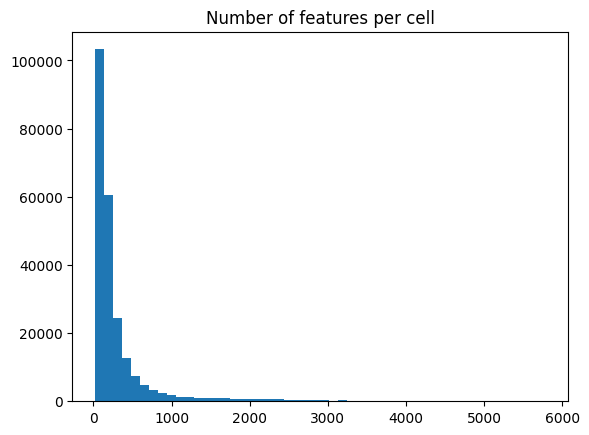

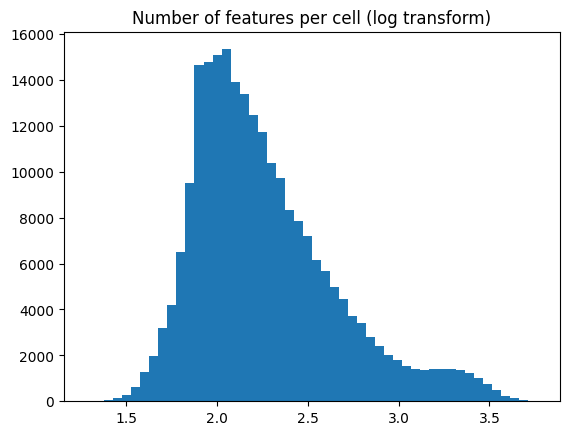

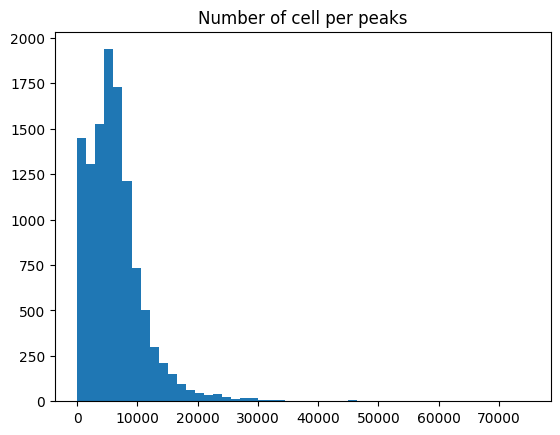

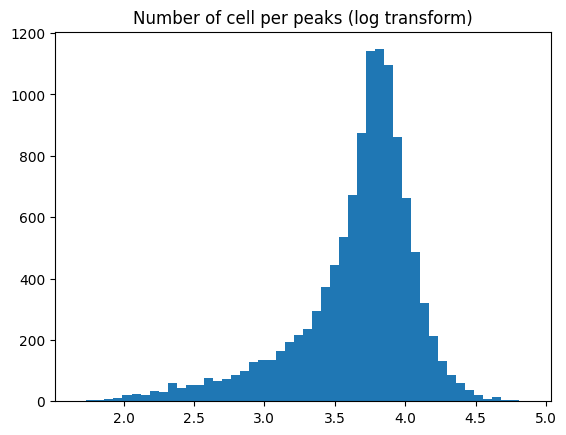

In [8]:
#Visulazation of nb_features per cell
plt.hist(D20_1_ATAC.obs.nb_features, bins=50)
plt.title("Number of features per cell")
plt.show()

plt.hist(np.log10(D20_1_ATAC.obs.nb_features), bins=50)
plt.title("Number of features per cell (log transform)")
plt.show()

#Distribution number cells per peak
plt.hist(D20_1_ATAC.var.n_cells, bins=50)
plt.title("Number of cell per peaks")
plt.show()

plt.hist(np.log10(D20_1_ATAC.var.n_cells), bins=50)
plt.title("Number of cell per peaks (log transform)")
plt.show()


In [ ]:
epi.pp.lazy(D20_1_ATAC)
sc.pl.umap(D20_1_ATAC, color=['nb_features'], wspace=0.3)

#### Does ovearll chromatin accessibily change overtime???

In [44]:
D8_1 = anndata.read_mtx("../data/initial_10x_outputs/filtered_feature_bc_matrix-D8_1/matrix.mtx.gz")
feat_name = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D8_1/features.tsv.gz'), sep='\t', header=None, usecols=[0,2,3,4,5], names=['peakID','name2','type','chr','start','end'])
barcodes = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D8_1/barcodes.tsv.gz'), sep='\t', header=None)
barcodes = list(barcodes[0])

D8_1.obs_names = feat_name['peakID']
D8_1.var_names = barcodes

#Only keep the ATAC features
peak_name = feat_name[feat_name.type == 'Peaks']
peak_name = list(peak_name['peakID'])

D8_1_ATAC = D8_1[peak_name]

#Binarize data
epi.pp.binarize(D8_1_ATAC)
print(np.max(D8_1_ATAC.X))

#Basic filtering cells/genes
epi.pp.filter_cells(D8_1_ATAC, min_features=1)
epi.pp.filter_features(D8_1_ATAC, min_cells=1)

1.0


In [12]:
D8_2 = anndata.read_mtx("../data/initial_10x_outputs/filtered_feature_bc_matrix-D8_2/matrix.mtx.gz")
feat_name = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D8_2/features.tsv.gz'), sep='\t', header=None, usecols=[0,2,3,4,5], names=['peakID','name2','type','chr','start','end'])
barcodes = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D8_2/barcodes.tsv.gz'), sep='\t', header=None)
barcodes = list(barcodes[0])

D8_2.obs_names = feat_name['peakID']
D8_2.var_names = barcodes

#Only keep the ATAC features
peak_name = feat_name[feat_name.type == 'Peaks']
peak_name = list(peak_name['peakID'])

D8_2_ATAC = D8_2[peak_name]

#Binarize data
epi.pp.binarize(D8_2_ATAC)
print(np.max(D8_2_ATAC.X))

#Basic filtering cells/genes
epi.pp.filter_cells(D8_2_ATAC, min_features=1)
epi.pp.filter_features(D8_2_ATAC, min_cells=1)

1.0


In [13]:
D12_1 = anndata.read_mtx("../data/initial_10x_outputs/filtered_feature_bc_matrix-D12_1/matrix.mtx.gz")
feat_name = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D12_1/features.tsv.gz'), sep='\t', header=None, usecols=[0,2,3,4,5], names=['peakID','name2','type','chr','start','end'])
barcodes = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D12_1/barcodes.tsv.gz'), sep='\t', header=None)
barcodes = list(barcodes[0])

D12_1.obs_names = feat_name['peakID']
D12_1.var_names = barcodes

#Only keep the ATAC features
peak_name = feat_name[feat_name.type == 'Peaks']
peak_name = list(peak_name['peakID'])

D12_1_ATAC = D12_1[peak_name]

#Binarize data
epi.pp.binarize(D12_1_ATAC)
print(np.max(D12_1_ATAC.X))

#Basic filtering cells/genes
epi.pp.filter_cells(D12_1_ATAC, min_features=1)
epi.pp.filter_features(D12_1_ATAC, min_cells=1)

1.0


In [14]:
D12_2 = anndata.read_mtx("../data/initial_10x_outputs/filtered_feature_bc_matrix-D12_2/matrix.mtx.gz")
feat_name = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D12_2/features.tsv.gz'), sep='\t', header=None, usecols=[0,2,3,4,5], names=['peakID','name2','type','chr','start','end'])
barcodes = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D12_2/barcodes.tsv.gz'), sep='\t', header=None)
barcodes = list(barcodes[0])

D12_2.obs_names = feat_name['peakID']
D12_2.var_names = barcodes

#Only keep the ATAC features
peak_name = feat_name[feat_name.type == 'Peaks']
peak_name = list(peak_name['peakID'])

D12_2_ATAC = D12_2[peak_name]

#Binarize data
epi.pp.binarize(D12_2_ATAC)
print(np.max(D12_2_ATAC.X))

#Basic filtering cells/genes
epi.pp.filter_cells(D12_2_ATAC, min_features=1)
epi.pp.filter_features(D12_2_ATAC, min_cells=1)

1.0


In [15]:
D22_1 = anndata.read_mtx("../data/initial_10x_outputs/filtered_feature_bc_matrix-D22_1/matrix.mtx.gz")
feat_name = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D22_1/features.tsv.gz'), sep='\t', header=None, usecols=[0,2,3,4,5], names=['peakID','name2','type','chr','start','end'])
barcodes = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D22_1/barcodes.tsv.gz'), sep='\t', header=None)
barcodes = list(barcodes[0])

D22_1.obs_names = feat_name['peakID']
D22_1.var_names = barcodes

#Only keep the ATAC features
peak_name = feat_name[feat_name.type == 'Peaks']
peak_name = list(peak_name['peakID'])

D22_1_ATAC = D22_1[peak_name]

#Binarize data
epi.pp.binarize(D22_1_ATAC)
print(np.max(D22_1_ATAC.X))

#Basic filtering cells/genes
epi.pp.filter_cells(D22_1_ATAC, min_features=1)
epi.pp.filter_features(D22_1_ATAC, min_cells=1)

1.0


#### What's the overlap of peaks accross timepoints

In [32]:
D8_1_ATAC.obs_names

Index(['1:9775-10675', '1:28912-29812', '1:132986-133725', '1:136201-137097',
       '1:138630-139593', '1:180637-181488', '1:186163-186914',
       '1:191145-191973', '1:264253-265145', '1:267604-268487',
       ...
       'KI270711.1:27072-27968', 'KI270711.1:29017-29933',
       'KI270713.1:3948-4849', 'KI270713.1:13169-13899',
       'KI270713.1:15227-15837', 'KI270713.1:15948-16365',
       'KI270713.1:21523-22435', 'KI270713.1:28629-29498',
       'KI270713.1:31297-32137', 'KI270713.1:32555-33277'],
      dtype='object', name='peakID', length=211910)

In [45]:
D8_1_ATAC.obs['chr'] = D8_1_ATAC.obs_names.to_series().str.split(':', n=1).str.get(0)
D8_1_ATAC.obs['start'] = D8_1_ATAC.obs_names.to_series().apply(lambda st: st[st.find(":")+1:st.find("-")]).astype('int')
D8_1_ATAC.obs['end'] = D8_1_ATAC.obs_names.to_series().str.split('-', n=1).str.get(1).astype('int')

In [25]:
D8_1_ATAC.obs

nb_features         chr   start     end
peakID                                                         
1:9775-10675                    298           1    9775   10675
1:28912-29812                    75           1   28912   29812
1:132986-133725                  48           1  132986  133725
1:136201-137097                  87           1  136201  137097
1:138630-139593                  63           1  138630  139593
...                             ...         ...     ...     ...
KI270713.1:15948-16365          240  KI270713.1   15948   16365
KI270713.1:21523-22435         3736  KI270713.1   21523   22435
KI270713.1:28629-29498          505  KI270713.1   28629   29498
KI270713.1:31297-32137          504  KI270713.1   31297   32137
KI270713.1:32555-33277          252  KI270713.1   32555   33277

[211910 rows x 4 columns]

In [98]:
np.mean([D8_1_ATAC.n_obs, D12_1_ATAC.n_obs, D20_1_ATAC.n_obs, D22_1_ATAC.n_obs])

215933.75

In [12]:
!bedtools intersect -a ../../../Downloads/atac_peaks-D8_1.bed -b ../../../Downloads/atac_peaks-D22_1.bed > 'intersect.csv'
pd.read_csv('intersect.csv', sep='\t').shape[0]

124140

In [39]:
pd.read_csv('../../../Downloads/atac_peaks-D8_1.bed', sep='\t', skiprows=np.arange(50), header=None)

0       1       2
0                1    9775   10675
1                1   28912   29812
2                1  132986  133725
3                1  136201  137097
4                1  138630  139593
...            ...     ...     ...
211905  KI270713.1   15948   16365
211906  KI270713.1   21523   22435
211907  KI270713.1   28629   29498
211908  KI270713.1   31297   32137
211909  KI270713.1   32555   33277

[211910 rows x 3 columns]

In [8]:
import pyfaidx

In [9]:
genes = pyfaidx.Fasta('../../../Downloads/hg38.fa')

In [10]:
genes.keys()

odict_keys(['chr1', 'chr10', 'chr11', 'chr11_KI270721v1_random', 'chr12', 'chr13', 'chr14', 'chr14_GL000009v2_random', 'chr14_GL000225v1_random', 'chr14_KI270722v1_random', 'chr14_GL000194v1_random', 'chr14_KI270723v1_random', 'chr14_KI270724v1_random', 'chr14_KI270725v1_random', 'chr14_KI270726v1_random', 'chr15', 'chr15_KI270727v1_random', 'chr16', 'chr16_KI270728v1_random', 'chr17', 'chr17_GL000205v2_random', 'chr17_KI270729v1_random', 'chr17_KI270730v1_random', 'chr18', 'chr19', 'chr1_KI270706v1_random', 'chr1_KI270707v1_random', 'chr1_KI270708v1_random', 'chr1_KI270709v1_random', 'chr1_KI270710v1_random', 'chr1_KI270711v1_random', 'chr1_KI270712v1_random', 'chr1_KI270713v1_random', 'chr1_KI270714v1_random', 'chr2', 'chr20', 'chr21', 'chr22', 'chr22_KI270731v1_random', 'chr22_KI270732v1_random', 'chr22_KI270733v1_random', 'chr22_KI270734v1_random', 'chr22_KI270735v1_random', 'chr22_KI270736v1_random', 'chr22_KI270737v1_random', 'chr22_KI270738v1_random', 'chr22_KI270739v1_random', 

In [34]:
np.unique(D8_1_ATAC.obs.chr)

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '3', '4', '5', '6', '7', '8', '9', 'X', 'Y'],
      dtype=object)

In [46]:
#Remove some chromosome
D8_1_ATAC = D8_1_ATAC[np.logical_or(np.logical_or(D8_1_ATAC.obs.chr.str.isnumeric(), D8_1_ATAC.obs.chr == 'X'), D8_1_ATAC.obs.chr == 'Y')]

#Fetch sequence on reference genome using location of peaks
D8_1_ATAC.obs['chr'] = 'chr' + D8_1_ATAC.obs['chr']
D8_1_ATAC.obs['sequence'] = D8_1_ATAC.obs.apply(lambda x: (genes[x['chr']][x['start']:x['end']]).seq, axis=1)

In [51]:
genes['chr1'][9775:10675].seq

'NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNtaaccctaaccctaaccctaaccctaaccctaaccctaaccctaaccctaaccctaaccctaaccctaaccctaaccctaaccctaaccctaaccctaaccctaacccaaccctaaccctaaccctaaccctaaccctaaccctaacccctaaccctaaccctaaccctaaccctaacctaaccctaaccctaaccctaaccctaaccctaaccctaaccctaaccctaacccctaaccctaaccctaaaccctaaaccctaaccctaaccctaaccctaaccctaaccccaaccccaaccccaaccccaaccccaaccccaaccctaacccctaaccctaaccctaaccctaccctaaccctaaccctaaccctaaccctaaccctaacccctaacccctaaccctaaccctaaccctaaccctaaccctaaccctaacccctaaccctaaccctaaccctaaccctcgcggtaccctcagccggcccgcccgcccgggtctgacctgaggagaactgtgctccgccttcagagtaccaccgaaatctgtgcagaggacaacgcagctccgccctcgcggtgctctccgggtctgtgctgaggagaacgcaactccgccgttgcaaaggcgcgccgcgccggcgcaggcgcagagaggcgcgccgcgccggcgc'

In [56]:
D8_1_ATAC.obs.sequence[10]

'GGCTAAGGCTGCTATTCTTTTGCTCCTTGTAACTTCCTACAGTGTTGTCAGCATCCACATACTTCTCTGTGGGGTTggtctcagagccaggttaccttgtcttaggtccagtggcaccctgactggcttggtgtccttgaacaagttacctaacctctccatacctcagtccctcagctgtaaaattaaaaaaaaaaaaaaagaagaagaagagtacctactgtatagcattgatttgaagattgaatgagctggtattatacaacgtttagaagcagtgcctgacacgcaaaaggctctcaacaaatACTATCCTTTACTAATATCCTGTGTGTCTGTATCAGAGCTGGTGGGGTGGAGGGACAGAAACAAGTGGGAGAAGGTAAAGAGATGGGCAAATGATCTCTAAACTCTCTCTGGCACTAACACAATTCTTTATTATGTGTTTTGTCTGGCTCTTTATATTGATAGCTGTTCCAGAGGCAATCAATAGCTATTAGTCGGTTTTATTCTTATTTTTCTGTCTGATCTTACAAGGGAGCAAACTGTGGCAAAGTATGAACTTACTTCTCAGGAAATTAACCATTATATTGGCAATCACTGTGATTATTTGAACTTCAGCGTCTGGACAAATTTAGTCACATGAAATACAGAAGAGAGATTTCTCATGGTTAAAACGAAGCtctctttatttgcttctgctaattaaaaaatcagagc'

In [36]:
D8_1_ATAC.obs

nb_features   chr     start       end  \
peakID                                                       
1:9775-10675                 298  chr1      9775     10675   
1:28912-29812                 75  chr1     28912     29812   
1:132986-133725               48  chr1    132986    133725   
1:136201-137097               87  chr1    136201    137097   
1:138630-139593               63  chr1    138630    139593   
...                          ...   ...       ...       ...   
Y:56727667-56728540           41  chrY  56727667  56728540   
Y:56763068-56763971          303  chrY  56763068  56763971   
Y:56829173-56830024          108  chrY  56829173  56830024   
Y:56833886-56834698          186  chrY  56833886  56834698   
Y:56836375-56837275          173  chrY  56836375  56837275   

                                                              sequence  
peakID                                                                  
1:9775-10675         (((N)), ((N)), ((N)), ((N)), ((N)), ((N)), ((N...  
1:28912-29812        (((G)), ((G)), ((G)), ((C)), ((A)), ((G)), ((C...  
1:132986-133725      (((A)), ((G)), ((A)), ((G)), ((G)), ((G)), ((A...  
1:136201-137097      (((A)), ((G)), ((G)), ((C)), ((A)), ((G)), ((G...  
1:138630-139593      (((C)), ((A)), ((A)), ((G)), ((A)), ((G)), ((C...  
...                                                                ...  
Y:56727667-56728540  (((g)), ((g)), ((a)), ((a)), ((t)), ((g)), ((t...  
Y:56763068-56763971  (((g)), ((g)), ((a)), ((c)), ((t)), ((g)), ((g...  
Y:56829173-56830024  (((t)), ((a)), ((t)), ((t)), ((c)), ((c)), ((a...  
Y:56833886-56834698  (((c)), ((t)), ((c)), ((c)), ((a)), ((c)), ((g...  
Y:56836375-56837275  (((t)), ((c)), ((c)), ((a)), ((c)), ((t)), ((g...  

[211840 rows x 5 columns]

In [61]:
from anndata.experimental.pytorch import AnnLoader

In [72]:
dataloader = AnnLoader(D8_1_ATAC, batch_size=128, shuffle=True)
batch= dataloader.dataset[:10]

device(type='cpu')

In [79]:
cell_types = pd.read_csv('../data/cell_types.csv', index_col=0)
cell_types

cell_type
AAACAGCCAAACGCGA-1-0               Somite
AAACAGCCACAGGAAT-1-0               Somite
AAACAGCCACATGCTA-1-0               Somite
AAACAGCCAGGCCATT-1-0               Somite
AAACAGCCATCCGTAA-1-0               Somite
...                                   ...
TTTGTGTTCCCGTTGT-1-7      Immature neuron
TTTGTGTTCGTAATCA-1-7          Mesenchymal
TTTGTTGGTCCGCTGT-1-7          Mesenchymal
TTTGTTGGTGTGAGAG-1-7               Somite
TTTGTTGGTTTGGTTC-1-7  Neuronal progenitor

[100742 rows x 1 columns]

In [87]:
cell_types.index.to_series()
#data[:,cell_types.index.to_series()]

AAACAGCCAAACGCGA-1-0    AAACAGCCAAACGCGA-1-0
AAACAGCCACAGGAAT-1-0    AAACAGCCACAGGAAT-1-0
AAACAGCCACATGCTA-1-0    AAACAGCCACATGCTA-1-0
AAACAGCCAGGCCATT-1-0    AAACAGCCAGGCCATT-1-0
AAACAGCCATCCGTAA-1-0    AAACAGCCATCCGTAA-1-0
                                ...         
TTTGTGTTCCCGTTGT-1-7    TTTGTGTTCCCGTTGT-1-7
TTTGTGTTCGTAATCA-1-7    TTTGTGTTCGTAATCA-1-7
TTTGTTGGTCCGCTGT-1-7    TTTGTTGGTCCGCTGT-1-7
TTTGTTGGTGTGAGAG-1-7    TTTGTTGGTGTGAGAG-1-7
TTTGTTGGTTTGGTTC-1-7    TTTGTTGGTTTGGTTC-1-7
Length: 100742, dtype: object

In [89]:
data.var_names

Index(['AAACAGCCAAACGCGA-1', 'AAACAGCCAATGCCTA-1', 'AAACAGCCACAGGAAT-1',
       'AAACAGCCACATGCTA-1', 'AAACAGCCAGGCCATT-1', 'AAACAGCCATCCGTAA-1',
       'AAACATGCAAGCCACT-1', 'AAACATGCACAGGATG-1', 'AAACATGCAGCACCAT-1',
       'AAACATGCAGCTCAAC-1',
       ...
       'TTTGTGTTCAAGCTTA-1', 'TTTGTGTTCAATAGCC-1', 'TTTGTGTTCATTACAG-1',
       'TTTGTGTTCCTGGCTT-1', 'TTTGTGTTCGCATTAA-1', 'TTTGTTGGTAAGGTCC-1',
       'TTTGTTGGTCCTAGTT-1', 'TTTGTTGGTGGGTGAA-1', 'TTTGTTGGTTGCACAA-1',
       'TTTGTTGGTTTAACCC-1'],
      dtype='object', length=14795)

In [81]:
data_path = '../data/initial_10x_outputs'
name_dataset = 'D8_1'

path_count = data_path + '/filtered_feature_bc_matrix-' + name_dataset

data = anndata.read_mtx(path_count + "/matrix.mtx.gz")

feat_name = pd.read_csv(gzip.open(path_count + '/features.tsv.gz'), sep='\t', header=None, usecols=[0,2,3,4,5], names=['peakID','name2','type','chr','start','end'])
barcodes = pd.read_csv(gzip.open(path_count + '/barcodes.tsv.gz'), sep='\t', header=None)
barcodes = list(barcodes[0])

data.obs_names = feat_name['peakID']
data.var_names = barcodes

#Load the cell type information
print(data)
cell_types = pd.read_csv('../data/cell_types.csv', index_col=0)
data = data[:,cell_types.index.to_series()]
print(data)

AnnData object with n_obs × n_vars = 232630 × 14795


KeyError: "Values ['AAACAGCCAAACGCGA-1-0', 'AAACAGCCACAGGAAT-1-0', 'AAACAGCCACATGCTA-1-0', 'AAACAGCCAGGCCATT-1-0', 'AAACAGCCATCCGTAA-1-0', 'AAACATGCAAGCCACT-1-0', 'AAACATGCACAGGATG-1-0', 'AAACATGCAGGCGAGT-1-0', 'AAACATGCATTATGCG-1-0', 'AAACCAACAAACTCAT-1-0', 'AAACCAACACCGGTAT-1-0', 'AAACCAACACTTCATC-1-0', 'AAACCAACAGCCTAAC-1-0', 'AAACCAACATAATGTC-1-0', 'AAACCGAAGAGAAGGG-1-0', 'AAACCGAAGCAGGTTT-1-0', 'AAACCGAAGCCTCTGT-1-0', 'AAACCGAAGGCTAATC-1-0', 'AAACCGAAGGGACGCA-1-0', 'AAACCGAAGTAACGAG-1-0', 'AAACCGAAGTCTGGGC-1-0', 'AAACCGCGTAACAGGG-1-0', 'AAACCGCGTAGCTGGT-1-0', 'AAACCGCGTGATGAAA-1-0', 'AAACCGCGTGGATTCA-1-0', 'AAACCGCGTGTTGTGA-1-0', 'AAACCGCGTTAAGCTG-1-0', 'AAACCGGCAATAATCC-1-0', 'AAACCGGCAGGCCATT-1-0', 'AAACCGGCAGTAAAGC-1-0', 'AAACCGGCATAACGGG-1-0', 'AAACCGGCATTTGCTC-1-0', 'AAACGCGCACGGTACT-1-0', 'AAACGCGCATCCGTAA-1-0', 'AAACGGATCACAAGCT-1-0', 'AAACGGATCAGCTAAC-1-0', 'AAACGGATCCCTCAAC-1-0', 'AAACGGATCGCTTGCT-1-0', 'AAACGGATCGGCCATA-1-0', 'AAACGGATCGTTAGTA-1-0', 'AAACGGATCTAACTGA-1-0', 'AAACGTACAAACTAAG-1-0', 'AAACGTACAAAGCCTC-1-0', 'AAACGTACAACTAGCC-1-0', 'AAACGTACAAGCTACC-1-0', 'AAACGTACAAGGACCA-1-0', 'AAACGTACACCAAAGG-1-0', 'AAACGTACACTTACAG-1-0', 'AAACGTACAGCAATAA-1-0', 'AAACGTACATAAAGCA-1-0', 'AAACGTACATTGTTGG-1-0', 'AAAGCAAGTCATCCTG-1-0', 'AAAGCAAGTCCTTAGT-1-0', 'AAAGCAAGTCTAACCT-1-0', 'AAAGCAAGTTGGCGTG-1-0', 'AAAGCACCAAAGCTCC-1-0', 'AAAGCACCAATATAGG-1-0', 'AAAGCACCACGCAACT-1-0', 'AAAGCACCACGTTACA-1-0', 'AAAGCACCAGGTTACC-1-0', 'AAAGCACCATGTTGCA-1-0', 'AAAGCACCATTCAGCA-1-0', 'AAAGCCCGTGAGGTGA-1-0', 'AAAGCCCGTGGAAGGC-1-0', 'AAAGCCCGTTCTTTAG-1-0', 'AAAGCCCGTTTGCGCC-1-0', 'AAAGCCGCAGGAACAT-1-0', 'AAAGCGGGTAACCTAG-1-0', 'AAAGCGGGTACTGAAT-1-0', 'AAAGCGGGTGGTTCTT-1-0', 'AAAGCGGGTTAGCATG-1-0', 'AAAGCGGGTTCCAGGG-1-0', 'AAAGCGGGTTCTTTAG-1-0', 'AAAGCTTGTATTCGCT-1-0', 'AAAGCTTGTCACAAAT-1-0', 'AAAGCTTGTGAGGTGA-1-0', 'AAAGCTTGTGATTTGG-1-0', 'AAAGCTTGTTAGCAGC-1-0', 'AAAGCTTGTTCGCTTG-1-0', 'AAAGGACGTAATCCCT-1-0', 'AAAGGACGTAATTAGC-1-0', 'AAAGGACGTACAATGT-1-0', 'AAAGGACGTAGTAAGA-1-0', 'AAAGGACGTGCGCATG-1-0', 'AAAGGACGTGTTAGCA-1-0', 'AAAGGACGTTGTTGCT-1-0', 'AAAGGAGCAAGTGTCC-1-0', 'AAAGGAGCAATCATGT-1-0', 'AAAGGAGCAGGCATGA-1-0', 'AAAGGAGCAGGGAGCT-1-0', 'AAAGGAGCATCCAGGT-1-0', 'AAAGGAGCATGAATAG-1-0', 'AAAGGAGCATTAGCGC-1-0', 'AAAGGCTCAAGGACCA-1-0', 'AAAGGCTCAATCTCTC-1-0', 'AAAGGCTCACAAAGAC-1-0', 'AAAGGCTCACGGTTTA-1-0', 'AAAGGCTCAGGAAGCC-1-0', 'AAAGGCTCATAGACTT-1-0', 'AAAGGCTCATCCAGGT-1-0', 'AAAGGTTAGACAAAGT-1-0', 'AAAGGTTAGCGGGCAA-1-0', 'AAAGGTTAGGACAACA-1-0', 'AAAGGTTAGGGTCTAT-1-0', 'AAAGGTTAGTCCTGAG-1-0', 'AAAGGTTAGTTAGCTA-1-0', 'AAATCCGGTAAAGCGG-1-0', 'AAATCCGGTAAGCTCA-1-0', 'AAATCCGGTGACATAT-1-0', 'AAATCCGGTGGATTCA-1-0', 'AAATCCGGTTGCCTCA-1-0', 'AAATCCGGTTGTAAAC-1-0', 'AAATGCCTCACTCGCT-1-0', 'AAATGCCTCCACCCTG-1-0', 'AAATGCCTCCCTGGTT-1-0', 'AAATGCCTCCTCCTAA-1-0', 'AAATGCCTCGAAGTAG-1-0', 'AAATGCCTCGCGACAC-1-0', 'AAATGCCTCGCTAGTG-1-0', 'AAATGCCTCTAGCTTT-1-0', 'AAATGCCTCTGGCATG-1-0', 'AAATGGCCAAAGCTCC-1-0', 'AAATGGCCAAATTGCT-1-0', 'AAATGGCCACTAGGTC-1-0', 'AAATGGCCATCAGCAC-1-0', 'AAATGGCCATCCCTCA-1-0', 'AAATGGCCATGAGCAG-1-0', 'AAATGGCCATTAAGCT-1-0', 'AACAAAGGTAAACAAG-1-0', 'AACAAAGGTACCTTAC-1-0', 'AACAAAGGTAGTCAAT-1-0', 'AACAAAGGTCGACTCC-1-0', 'AACAAAGGTCTTGCTG-1-0', 'AACAAAGGTGCTCCAC-1-0', 'AACAAAGGTTAACACG-1-0', 'AACAAAGGTTAGCATG-1-0', 'AACAAAGGTTCAAGAT-1-0', 'AACAAAGGTTTATTCG-1-0', 'AACAAGCCAACCGCCA-1-0', 'AACAAGCCAACCTGGT-1-0', 'AACAAGCCAAGTGAAC-1-0', 'AACAAGCCAAGTGTCC-1-0', 'AACAAGCCAATAGCCC-1-0', 'AACAAGCCACAAAGCG-1-0', 'AACAAGCCACTAGGTC-1-0', 'AACAAGCCATAAGGAC-1-0', 'AACAAGCCATCAGCAC-1-0', 'AACAAGCCATGTTGCA-1-0', 'AACAGATAGGAACCGG-1-0', 'AACAGATAGGCTACTG-1-0', 'AACAGATAGGGCCATC-1-0', 'AACAGATAGTCATTTC-1-0', 'AACAGATAGTTACCGG-1-0', 'AACAGCAAGAGGATAT-1-0', 'AACAGCAAGATAACCC-1-0', 'AACAGCAAGCACTTGG-1-0', 'AACAGCAAGCCTGTTC-1-0', 'AACAGCAAGCTCCTTA-1-0', 'AACAGCAAGGAGGCAT-1-0', 'AACAGCAAGGCGCTAC-1-0', 'AACAGCAAGTCAGGCC-1-0', 'AACAGGATCAGGAAGC-1-0', 'AACAGGATCATAGACC-1-0', 'AACAGGATCCGTTATT-1-0', 'AACAGGATCCTCCTAA-1-0', 'AACAGGATCCTTGTTG-1-0', 'AACAGGATCGTCATTT-1-0', 'AACAGGATCTAACTGA-1-0', 'AACATAGCAAACAACA-1-0', 'AACATAGCAATTAGCT-1-0', 'AACATAGCAGCTAATT-1-0', 'AACATAGCAGTAAGTA-1-0', 'AACATAGCATCCCTCA-1-0', 'AACATAGCATCGTTCT-1-0', 'AACATCATCCACAATA-1-0', 'AACATCATCCTACCTA-1-0', 'AACATCATCGCTCCAT-1-0', 'AACATTGTCAAAGGCA-1-0', 'AACATTGTCATGTTTC-1-0', 'AACATTGTCCCGCATT-1-0', 'AACATTGTCCGTCCAT-1-0', 'AACATTGTCTTAAGTG-1-0', 'AACCCGCAGACAACGA-1-0', 'AACCCGCAGGACCGCT-1-0', 'AACCCGCAGGCTGTCA-1-0', 'AACCCGCAGTGAGCAA-1-0', 'AACCGCTCAACTAACT-1-0', 'AACCGCTCAGAAATTG-1-0', 'AACCGCTCAGAGAGCC-1-0', 'AACCGCTCAGCAATAA-1-0', 'AACCGCTCAGCCAGTT-1-0', 'AACCGCTCAGGAACTG-1-0', 'AACCGCTCAGGCTACT-1-0', 'AACCGCTCATGAGCAG-1-0', 'AACCGCTCATTGACAT-1-0', 'AACCGCTCATTGTCAG-1-0', 'AACCGGCTCAAGTGTC-1-0', 'AACCGGCTCAATCATG-1-0', 'AACCGGCTCATGACCG-1-0', 'AACCGGCTCATGGTTA-1-0', 'AACCGGCTCATTGACA-1-0', 'AACCGGCTCCGCAAAT-1-0', 'AACCGGCTCGTTTCGC-1-0', 'AACCTAATCAATCTCT-1-0', 'AACCTAATCAATTGGC-1-0', 'AACCTAATCCCTCATA-1-0', 'AACCTAATCCTGGTCT-1-0', 'AACCTAATCGCGCTAA-1-0', 'AACCTCACAACTAGAA-1-0', 'AACCTCACAAGGTGCA-1-0', 'AACCTCACAATAATGG-1-0', 'AACCTCACACAAACTT-1-0', 'AACCTCACACATACTG-1-0', 'AACCTCACACTTAACG-1-0', 'AACCTCACAGCGCTTG-1-0', 'AACCTCACAGTCTAGC-1-0', 'AACCTCACATCCAGGT-1-0', 'AACCTCACATCGTTCT-1-0', 'AACCTCCTCATTGCAA-1-0', 'AACCTCCTCCCGAACA-1-0', 'AACCTCCTCCCTCAGT-1-0', 'AACCTCCTCCTTTACG-1-0', 'AACCTCCTCGACCTGA-1-0', 'AACCTCCTCGCATTAA-1-0', 'AACCTCCTCTAAATCG-1-0', 'AACCTCCTCTACCTCA-1-0', 'AACCTTAAGATTGAGG-1-0', 'AACCTTAAGCACGTTG-1-0', 'AACCTTAAGCATGACT-1-0', 'AACCTTAAGCCTAATA-1-0', 'AACCTTAAGCCTGTGA-1-0', 'AACCTTAAGCGGCTGT-1-0', 'AACCTTAAGCGTGCAC-1-0', 'AACCTTAAGCTATATG-1-0', 'AACCTTAAGCTGTACG-1-0', 'AACCTTAAGGCATTAC-1-0', 'AACCTTAAGGGACGCA-1-0', 'AACCTTAAGTCACCAG-1-0', 'AACCTTAAGTCAGTAC-1-0', 'AACCTTAAGTTATGTG-1-0', 'AACCTTGCAAGACTCC-1-0', 'AACCTTGCAATATGGA-1-0', 'AACCTTGCACCATATG-1-0', 'AACCTTGCACGTAAGG-1-0', 'AACCTTGCAGGAATCG-1-0', 'AACCTTGCAGTCTAGC-1-0', 'AACGACAAGCATGACT-1-0', 'AACGACAAGCATGTTA-1-0', 'AACGACAAGCCAAATC-1-0', 'AACGACAAGCCGCAGT-1-0', 'AACGACAAGGACCTCA-1-0', 'AACGACAAGGTTTGAC-1-0', 'AACGACAAGTTGGCCA-1-0', 'AACGACAAGTTTCCTG-1-0', 'AACGACAAGTTTGTCT-1-0', 'AACGCCCAGACACCGC-1-0', 'AACGCCCAGCAGGCCT-1-0', 'AACGCCCAGCTTAGCG-1-0', 'AACGCCCAGCTTCTCA-1-0', 'AACGCCCAGGCTAAGA-1-0', 'AACGCCCAGGGACCTC-1-0', 'AACGCCCAGGGCCATC-1-0', 'AACGCCCAGTGAACGA-1-0', 'AACGCCCAGTTAGCTA-1-0', 'AACGCTAGTAATAGCT-1-0', 'AACGCTAGTGAGCGAA-1-0', 'AACGCTAGTGGACCTG-1-0', 'AACGCTAGTTAGCGTA-1-0', 'AACGCTAGTTTAGCTC-1-0', 'AACGCTAGTTTGCGAA-1-0', 'AACGCTAGTTTGCGCC-1-0', 'AACGCTAGTTTGCTGT-1-0', 'AACGGTAAGATAACCC-1-0', 'AACGGTAAGATTCCTT-1-0', 'AACGGTAAGCTCCTTA-1-0', 'AACGGTAAGGAAGCAC-1-0', 'AACGGTAAGGCGCACT-1-0', 'AACGGTAAGGCTAATC-1-0', 'AACGGTAAGGTAAGCA-1-0', 'AACGGTAAGTACCGCA-1-0', 'AACGGTAAGTATCGCG-1-0', 'AACGGTAAGTCCTTCA-1-0', 'AACGGTAAGTTTGAGC-1-0', 'AACTACTCAGCTACGT-1-0', 'AACTACTCAGGCATCT-1-0', 'AACTAGCTCAAGCTAC-1-0', 'AACTAGCTCAAGTGAG-1-0', 'AACTAGCTCAATGTGC-1-0', 'AACTAGCTCACTTTAC-1-0', 'AACTAGCTCATGCAAC-1-0', 'AACTAGCTCCACCTGT-1-0', 'AACTAGCTCCTTAATC-1-0', 'AACTAGCTCTGCAAAC-1-0', 'AACTAGCTCTGGTCCT-1-0', 'AACTAGTGTACTTCAC-1-0', 'AACTAGTGTCAACAAT-1-0', 'AACTAGTGTCAGGAAG-1-0', 'AACTAGTGTCGACTCC-1-0', 'AACTAGTGTTTGACCT-1-0', 'AACTCACAGACAACGA-1-0', 'AACTCACAGAGAGGCT-1-0', 'AACTCACAGCTCCTTA-1-0', 'AACTCACAGCTTATGA-1-0', 'AACTCACAGTATTGCA-1-0', 'AACTGTTCAAACCTTG-1-0', 'AACTGTTCAATAGTCT-1-0', 'AACTGTTCACTAAGAA-1-0', 'AACTGTTCAGCTCATA-1-0', 'AACTGTTCATATAACC-1-0', 'AACTGTTCATGAGTTT-1-0', 'AACTGTTCATTAGCGC-1-0', 'AACTTAGTCAAACTCA-1-0', 'AACTTAGTCATAACCA-1-0', 'AACTTAGTCATTAGTG-1-0', 'AACTTAGTCCCTCAGT-1-0', 'AACTTAGTCGAGGAGT-1-0', 'AACTTAGTCTGTTGCC-1-0', 'AACTTAGTCTTACTCG-1-0', 'AAGAACAGTACTGATG-1-0', 'AAGAACAGTAGGATTT-1-0', 'AAGAACAGTATTGTCC-1-0', 'AAGAACAGTGAAGCCT-1-0', 'AAGAACAGTGGTTCTT-1-0', 'AAGAACAGTTATAGCG-1-0', 'AAGAACAGTTGTCCAT-1-0', 'AAGAATCAGAGAGCCG-1-0', 'AAGAATCAGGAACGCG-1-0', 'AAGAATCAGGACTTAC-1-0', 'AAGAATCAGGAGGCAT-1-0', 'AAGAATCAGGGTCCAC-1-0', 'AAGAATCAGTTATGGC-1-0', 'AAGAATCAGTTATTCC-1-0', 'AAGAATCAGTTGTCAA-1-0', 'AAGACAAGTCAAAGGG-1-0', 'AAGACAAGTTCATCTA-1-0', 'AAGACATAGACACCGC-1-0', 'AAGACATAGCACAGAA-1-0', 'AAGACATAGCACAGCC-1-0', 'AAGACATAGGGATTAG-1-0', 'AAGACCAAGAAGGTGC-1-0', 'AAGACCAAGACAGGTA-1-0', 'AAGACCAAGCGAGTAA-1-0', 'AAGACCAAGCTAAAGG-1-0', 'AAGACCAAGCTGCACA-1-0', 'AAGACCAAGTGTTGCG-1-0', 'AAGACCAAGTTAGTTG-1-0', 'AAGCAAGTCCGCAAAT-1-0', 'AAGCAAGTCGCACAAT-1-0', 'AAGCAAGTCGCGCTAA-1-0', 'AAGCATGAGAATCGCT-1-0', 'AAGCATGAGCAAGACA-1-0', 'AAGCATGAGCATGGTT-1-0', 'AAGCATGAGCGTGCGT-1-0', 'AAGCATGAGCTACTGG-1-0', 'AAGCCACGTAAATTGC-1-0', 'AAGCCACGTAAGGTCC-1-0', 'AAGCCACGTGCACGCA-1-0', 'AAGCCACGTGTCCTGC-1-0', 'AAGCCACGTGTTCCCA-1-0', 'AAGCCACGTTCCGGGA-1-0', 'AAGCCACGTTGTTGTC-1-0', 'AAGCCTCCAAACAACA-1-0', 'AAGCCTCCAAACATAG-1-0', 'AAGCCTCCAGATAGAC-1-0', 'AAGCCTCCAGCAACAG-1-0', 'AAGCCTCCAGCATGAG-1-0', 'AAGCCTCCAGTAATAG-1-0', 'AAGCCTCCATTAAAGG-1-0', 'AAGCCTCCATTGTGGC-1-0', 'AAGCCTGTCAGGATGA-1-0', 'AAGCCTGTCCCGTTTA-1-0', 'AAGCCTGTCCTAAGTA-1-0', 'AAGCCTGTCCTCACTA-1-0', 'AAGCCTGTCCTTGTTG-1-0', 'AAGCCTGTCGACAAAG-1-0', 'AAGCCTGTCGGCCATA-1-0', 'AAGCCTGTCGGTTCCT-1-0', 'AAGCCTGTCTAAATCG-1-0', 'AAGCCTGTCTAACTGA-1-0', 'AAGCCTGTCTAGCGAT-1-0', 'AAGCCTTAGCGAGTAA-1-0', 'AAGCCTTAGCTCAATA-1-0', 'AAGCCTTAGGCGGATG-1-0', 'AAGCCTTAGGGCCATC-1-0', 'AAGCCTTAGTCGCAAT-1-0', 'AAGCGAATCCGCCTCA-1-0', 'AAGCGAATCGTTAAGC-1-0', 'AAGCGAATCTAAATCG-1-0', 'AAGCGAATCTATGACA-1-0', 'AAGCGAGGTACTTCAC-1-0', 'AAGCGAGGTCCGGTTC-1-0', 'AAGCGAGGTCCTGATT-1-0', 'AAGCGCTGTACAAAGA-1-0', 'AAGCGCTGTGTGCAAC-1-0', 'AAGCGCTGTTAGTACG-1-0', 'AAGCGCTGTTCCGGCT-1-0', 'AAGCGGGTCAATGAGG-1-0', 'AAGCGGGTCAGCTAAC-1-0', 'AAGCGGGTCATCCTCA-1-0', 'AAGCGGGTCATGCTCC-1-0', 'AAGCGGGTCCCATAGG-1-0', 'AAGCGGGTCCGCATGA-1-0', 'AAGCGGGTCGTTAGCG-1-0', 'AAGCGGGTCTCCATAT-1-0', 'AAGCGGGTCTGCAAGT-1-0', 'AAGCGGGTCTGTAATG-1-0', 'AAGCGGGTCTTGTCCA-1-0', 'AAGCGTTTCAAGCTAC-1-0', 'AAGCGTTTCCACCTTA-1-0', 'AAGCGTTTCCCGCAAA-1-0', 'AAGCGTTTCCCTCGCA-1-0', 'AAGCGTTTCCTCATCA-1-0', 'AAGCGTTTCCTTGCAC-1-0', 'AAGCTAGAGCCGCAGT-1-0', 'AAGCTAGAGCTCGCTT-1-0', 'AAGCTAGAGGATTTGC-1-0', 'AAGCTAGAGGCCTGGT-1-0', 'AAGCTAGAGTATTGCA-1-0', 'AAGCTAGAGTTAGTTG-1-0', 'AAGCTATGTAATCGTG-1-0', 'AAGCTATGTATTGGTG-1-0', 'AAGCTATGTGCTAGCG-1-0', 'AAGCTATGTTCACCCA-1-0', 'AAGCTATGTTGCAGTA-1-0', 'AAGCTATGTTGGGTTA-1-0', 'AAGCTCCCAATTGAAG-1-0', 'AAGCTCCCACCTCAGG-1-0', 'AAGCTCCCACCTGTAA-1-0', 'AAGCTCCCAGCACGAA-1-0', 'AAGCTCCCAGCTAATT-1-0', 'AAGCTCCCAGTAGGTG-1-0', 'AAGCTTGGTAACCACA-1-0', 'AAGCTTGGTAGTTAAC-1-0', 'AAGCTTGGTATTGAGT-1-0', 'AAGCTTGGTCGACTAA-1-0', 'AAGCTTGGTGCATTTC-1-0', 'AAGCTTGGTGTCCAGG-1-0', 'AAGCTTGGTTACTAGG-1-0', 'AAGCTTGGTTGCGGAT-1-0', 'AAGCTTGGTTTATGGG-1-0', 'AAGCTTGGTTTGGCTT-1-0', 'AAGGAAGCAACATAAG-1-0', 'AAGGAAGCAGCAATAA-1-0', 'AAGGAAGCAGTGAACG-1-0', 'AAGGAAGCATGTCAGC-1-0', 'AAGGATCCAACTAACT-1-0', 'AAGGATCCACCAACCG-1-0', 'AAGGATCCAGCCAGTT-1-0', 'AAGGATCCAGTGAACG-1-0', 'AAGGATCCAGTTTCTC-1-0', 'AAGGATCCATGAGCAG-1-0', 'AAGGATGTCACCTGTC-1-0', 'AAGGATGTCATGGCCA-1-0', 'AAGGATGTCATGGTTA-1-0', 'AAGGATGTCCAGCACA-1-0', 'AAGGATGTCCTCCATA-1-0', 'AAGGATGTCCTTAAGA-1-0', 'AAGGATGTCCTTCTAG-1-0', 'AAGGATGTCGAAGCGG-1-0', 'AAGGATTAGAAAGGAA-1-0', 'AAGGATTAGCGCTCAA-1-0', 'AAGGATTAGCTGTAAC-1-0', 'AAGGATTAGGAGGACT-1-0', 'AAGGCCCTCAAGCTAC-1-0', 'AAGGCCCTCACTAAGC-1-0', 'AAGGCCCTCATGACCG-1-0', 'AAGGCCCTCATGGCCA-1-0', 'AAGGCCCTCATGTGGT-1-0', 'AAGGCCCTCATTAGGC-1-0', 'AAGGCCCTCCCTGATC-1-0', 'AAGGCCCTCGGTTAGT-1-0', 'AAGGCCCTCGTTATAG-1-0', 'AAGGTATAGCAAGGGT-1-0', 'AAGGTATAGCAATAGG-1-0', 'AAGGTATAGCATGACT-1-0', 'AAGGTATAGCTAATTG-1-0', 'AAGGTATAGGTCATTA-1-0', 'AAGGTATAGGTTTACA-1-0', 'AAGGTATAGTGAAGTG-1-0', 'AAGGTATAGTTATTCC-1-0', 'AAGGTCAAGAGGCTAA-1-0', 'AAGGTCAAGCCACAAT-1-0', 'AAGGTCAAGCCATCAG-1-0', 'AAGGTCAAGGCAACAA-1-0', 'AAGGTCAAGGGACTAA-1-0', 'AAGGTCAAGTAAGGGC-1-0', 'AAGGTGCAGAACCTAC-1-0', 'AAGGTGCAGAGAGGCT-1-0', 'AAGGTGCAGCAGGTTT-1-0', 'AAGGTGCAGCGCCTAA-1-0', 'AAGGTGCAGCTAAAGG-1-0', 'AAGGTGCAGCTTGCTC-1-0', 'AAGGTGCAGGAACCAA-1-0', 'AAGGTGCAGGGTTATC-1-0', 'AAGGTGCAGTCATTGA-1-0', 'AAGGTGCAGTCGCTAG-1-0', 'AAGGTGCAGTTAGAGG-1-0', 'AAGTAGCCAACTAACT-1-0', 'AAGTAGCCACCATATG-1-0', 'AAGTAGCCAGATAGAC-1-0', 'AAGTAGCCAGCCAGAA-1-0', 'AAGTAGCCAGCCTAAC-1-0', 'AAGTAGCCAGTCTAAT-1-0', 'AAGTCTATCAAACTCA-1-0', 'AAGTCTATCATGTGGT-1-0', 'AAGTCTATCATTACAG-1-0', 'AAGTCTATCCCGCCTA-1-0', 'AAGTCTATCCTAAGTA-1-0', 'AAGTCTATCTCAATAG-1-0', 'AAGTGAAGTAATGGAA-1-0', 'AAGTGAAGTATTCGTC-1-0', 'AAGTGAAGTCAATGTG-1-0', 'AAGTGAAGTGGGTGAA-1-0', 'AAGTGAAGTTGCGGAT-1-0', 'AAGTGAAGTTTGCAGA-1-0', 'AAGTGAAGTTTGGGTA-1-0', 'AAGTGCAAGGAACACA-1-0', 'AAGTGCAAGGGCTAAA-1-0', 'AAGTGCAAGGTCCGTA-1-0', 'AAGTGTTGTACAATGT-1-0', 'AAGTGTTGTGTTGCTT-1-0', 'AAGTGTTGTTAACGGC-1-0', 'AAGTGTTGTTGTCCAT-1-0', 'AAGTTACGTCACAAAT-1-0', 'AAGTTACGTCATAAGT-1-0', 'AAGTTACGTCCAAGAC-1-0', 'AAGTTACGTCTTACTA-1-0', 'AAGTTACGTTAAATGC-1-0', 'AAGTTACGTTAACGAT-1-0', 'AAGTTACGTTACAACG-1-0', 'AAGTTACGTTAGCGTA-1-0', 'AAGTTACGTTGACTTC-1-0', 'AAGTTACGTTGCGGAT-1-0', 'AAGTTACGTTGTAAAC-1-0', 'AAGTTAGCAAAGCTCC-1-0', 'AAGTTAGCAATAGCAA-1-0', 'AAGTTAGCAGAGGGAG-1-0', 'AAGTTAGCAGGTTCAC-1-0', 'AAGTTTGTCACAGCCA-1-0', 'AAGTTTGTCCTCCCTC-1-0', 'AAGTTTGTCCTGAATA-1-0', 'AAGTTTGTCCTGATGG-1-0', 'AAGTTTGTCGTACCGA-1-0', 'AAGTTTGTCTTGGACG-1-0', 'AAGTTTGTCTTGTCCA-1-0', 'AATAACCGTAAGGTTT-1-0', 'AATAACCGTATGTGGC-1-0', 'AATAACCGTCAAACTG-1-0', 'AATAACCGTGCTCACC-1-0', 'AATAACCGTGGATTGC-1-0', 'AATAACCGTGTTGCTT-1-0', 'AATAACCGTTAGGTTG-1-0', 'AATAACCGTTATCCTA-1-0', 'AATAACCGTTCCTGAT-1-0', 'AATAACCGTTGTAAAC-1-0', 'AATAACCGTTTCCGGC-1-0', 'AATACCGGTAAGCACC-1-0', 'AATACCGGTACGATTG-1-0', 'AATACCGGTACTTAGG-1-0', 'AATACCGGTAGGTTTG-1-0', 'AATACCGGTCAAAGAA-1-0', 'AATACCGGTCCGTGAG-1-0', 'AATACCGGTGCATTAG-1-0', 'AATACCGGTGCTCCAC-1-0', 'AATACCGGTGTTGTGA-1-0', 'AATACCGGTTAAGCTG-1-0', 'AATAGAGGTAATAACC-1-0', 'AATAGAGGTACGCGCA-1-0', 'AATAGAGGTAGACAAA-1-0', 'AATAGAGGTGAGGTGA-1-0', 'AATAGAGGTGCTAGCG-1-0', 'AATAGAGGTTACATCC-1-0', 'AATAGAGGTTGTCCAT-1-0', 'AATAGAGGTTTCGCGC-1-0', 'AATAGCTGTAAGCTCA-1-0', 'AATAGCTGTAGGATTT-1-0', 'AATAGCTGTATACTGG-1-0', 'AATAGCTGTCATGCCC-1-0', 'AATAGCTGTCTTTATG-1-0', 'AATAGCTGTGAACAAA-1-0', 'AATAGCTGTGTGCAAC-1-0', 'AATAGCTGTTACGCGG-1-0', 'AATAGCTGTTGCAATG-1-0', 'AATAGCTGTTTAACCC-1-0', 'AATATCCCAAGGTGGC-1-0', 'AATATCCCAATAACCT-1-0', 'AATATCCCACCAGGTT-1-0', 'AATATCCCACTCAACA-1-0', 'AATATCCCACTTCACT-1-0', 'AATATCCCAGCCTGCA-1-0', 'AATATCCCAGGCTTCG-1-0', 'AATATCCCATTGCGGT-1-0', 'AATCAGGAGACTTACA-1-0', 'AATCAGGAGCAAGATG-1-0', 'AATCAGGAGGAACCAA-1-0', 'AATCAGGAGGACTTAC-1-0', 'AATCAGGAGGCAGGTG-1-0', 'AATCAGGAGGTAAGCA-1-0', 'AATCAGGAGGTATTGC-1-0', 'AATCAGGAGGTGAAAT-1-0', 'AATCAGGAGTAGCGGG-1-0', 'AATCAGGAGTTGTCCC-1-0', 'AATCAGGAGTTTGGTA-1-0', 'AATCATCCAACAGGAT-1-0', 'AATCATCCAAGTAAGC-1-0', 'AATCATCCACTGGCTG-1-0', 'AATCATCCAGCCTGCA-1-0', 'AATCATCCAGGATGGC-1-0', 'AATCATCCAGTTAGCC-1-0', 'AATCATGTCAGCAAAG-1-0', 'AATCATGTCCATCAGG-1-0', 'AATCATGTCCTCCATA-1-0', 'AATCATGTCTACCTCA-1-0', 'AATCATGTCTTGTCTG-1-0', 'AATCCATCAAAGCTCC-1-0', 'AATCCATCACAGCCAT-1-0', 'AATCCATCATCCCTCA-1-0', 'AATCCATCATTAGCGC-1-0', 'AATCCCTGTCCTAGTT-1-0', 'AATCCCTGTTTAGCTC-1-0', 'AATCCGTAGACCATAC-1-0', 'AATCCGTAGCATGAAG-1-0', 'AATCCGTAGCCGCAAC-1-0', 'AATCCGTAGTCATGCG-1-0', 'AATCCTAAGACACCGC-1-0', 'AATCCTAAGCCGCAAC-1-0', 'AATCCTAAGCTATTAG-1-0', 'AATCCTAAGGCCTTAG-1-0', 'AATCCTAAGGCTTAAC-1-0', 'AATCCTAAGGTTTGAC-1-0', 'AATCCTAAGTTAGTTG-1-0', 'AATCCTAAGTTCCCAC-1-0', 'AATCGCCCAAGCTTAT-1-0', 'AATCGCCCACAGGATG-1-0', 'AATCGCCCAGCACGAA-1-0', 'AATCTCAAGACAAAGT-1-0', 'AATCTCAAGCACTAGT-1-0', 'AATCTCAAGGGATGCG-1-0', 'AATCTCAAGGGCCACT-1-0', 'AATCTCAAGTCCTTCA-1-0', 'AATCTTGAGCCTAACG-1-0', 'AATCTTGAGCTATTGA-1-0', 'AATCTTGAGGAGCACG-1-0', 'AATCTTGAGGCTCATG-1-0', 'AATCTTGAGTCTGGGC-1-0', 'AATGAAGGTAGTTGGC-1-0', 'AATGAAGGTATACTGG-1-0', 'AATGAAGGTCGTTATC-1-0', 'AATGAAGGTCTAACAG-1-0', 'AATGAAGGTGATCAGC-1-0', 'AATGAAGGTGGACCTG-1-0', 'AATGAAGGTTACTTGC-1-0', 'AATGAAGGTTCCTCCT-1-0', 'AATGAAGGTTGTCCAT-1-0', 'AATGCAACAACATAAG-1-0', 'AATGCAACACAGAACG-1-0', 'AATGCAACACCCACCT-1-0', 'AATGCAACACTAAGCC-1-0', 'AATGCAACAGCAAGGC-1-0', 'AATGCAACAGGATGGC-1-0', 'AATGCATGTCCGCTGT-1-0', 'AATGCATGTCCGTGAG-1-0', 'AATGCATGTCGTTATC-1-0', 'AATGCATGTCTCAGCC-1-0', 'AATGCATGTGGATGTC-1-0', 'AATGCATGTTGAATCG-1-0', 'AATGCATGTTGCAATG-1-0', 'AATGCATGTTTATCTG-1-0', 'AATGCGCGTAGCAGCT-1-0', 'AATGCGCGTATTGCAG-1-0', 'AATGCGCGTGAAGCCT-1-0', 'AATGCGCGTTACTAGG-1-0', 'AATGGCGCACCTACTT-1-0', 'AATGGCGCATATTGAC-1-0', 'AATGTCATCAATCATG-1-0', 'AATGTCATCATGACCG-1-0', 'AATGTCATCCAAGTTA-1-0', 'AATGTCATCGAGCAAA-1-0', 'AATGTCATCGATTCTT-1-0', 'AATGTCATCTTAGCCC-1-0', 'AATGTCATCTTCAATC-1-0', 'AATGTCCAGCAACATC-1-0', 'AATGTCCAGCTTGCTC-1-0', 'AATGTCCAGTAAAGGT-1-0', 'AATGTCCAGTCTGGGC-1-0', 'AATGTCCAGTTTCCTG-1-0', 'AATTACCCAAACGCGA-1-0', 'AATTACCCACAGACTC-1-0', 'AATTACCCACCGGCTA-1-0', 'AATTACCCACCGGTAT-1-0', 'AATTACCCAGCATGGA-1-0', 'AATTACCCATCTAGCA-1-0', 'AATTACCCATTGTGAT-1-0', 'AATTACCCATTGTTGG-1-0', 'AATTAGCGTAACTACG-1-0', 'AATTAGCGTACCGTTT-1-0', 'AATTAGCGTCAAACTG-1-0', 'AATTAGCGTCCACAAA-1-0', 'AATTAGCGTGCTCCAC-1-0', 'AATTAGCGTGTTGCTT-1-0', 'AATTAGCGTTAGCCAA-1-0', 'AATTAGCGTTGTGATG-1-0', 'AATTAGCGTTTAAAGC-1-0', 'AATTAGGCAAATTGCT-1-0', 'AATTAGGCAAGCTAAA-1-0', 'AATTAGGCAAGGACCA-1-0', 'AATTAGGCACATTGCA-1-0', 'AATTAGGCATCGCTCC-1-0', 'AATTCGTCAACAGGAT-1-0', 'AATTCGTCAAGGGTTG-1-0', 'AATTCGTCAAGGTGCA-1-0', 'AATTCGTCAATATAGG-1-0', 'AATTCGTCAATTGACT-1-0', 'AATTCGTCACCTAATG-1-0', 'AATTCGTCACTTCACT-1-0', 'AATTCGTCAGTGAACG-1-0', 'AATTCGTCATCTAGCA-1-0', 'AATTCGTCATGATTGT-1-0', 'AATTCGTCATGTCAGC-1-0', 'AATTCGTCATGTCGCG-1-0', 'AATTGACGTCAATGTG-1-0', 'AATTGACGTGTCCAGG-1-0', 'AATTGACGTGTTAGCA-1-0', 'AATTGACGTTCTTTAG-1-0', 'AATTGACGTTGCGGAT-1-0', 'AATTGACGTTGTAAAC-1-0', 'AATTGCCAGAATGACG-1-0', 'AATTGCCAGGTGAAGC-1-0', 'AATTGCCAGTAAGTGG-1-0', 'AATTGCTCACGAACAG-1-0', 'AATTGCTCAGGCCATT-1-0', 'AATTGCTCAGGCTAGA-1-0', 'AATTGCTCATCTAGCA-1-0', 'AATTGGACACAATACT-1-0', 'AATTGGACACAATGCC-1-0', 'AATTGGACACTGGCCA-1-0', 'AATTGGACATAGGCGA-1-0', 'AATTGGACATGGCCCA-1-0', 'AATTGGACATTGTGTG-1-0', 'AATTGGGAGCATCCAG-1-0', 'AATTGGGAGCGCTAAT-1-0', 'AATTGGGAGGACCTCA-1-0', 'AATTGGGAGTCATTTC-1-0', 'AATTGGGAGTTGGCCA-1-0', 'AATTGGGAGTTGTCCC-1-0', 'AATTGTGTCAATGAGG-1-0', 'AATTGTGTCACCAATA-1-0', 'AATTGTGTCATTGTCT-1-0', 'AATTGTGTCCATAATG-1-0', 'AATTGTGTCCCAGTAG-1-0', 'AATTGTGTCCTGGCTT-1-0', 'AATTGTGTCGCGACAC-1-0', 'AATTGTGTCGGGCCAT-1-0', 'AATTGTGTCTAGCTAA-1-0', 'AATTGTGTCTTGTCCA-1-0', 'AATTTCCTCCTGGTCT-1-0', 'AATTTGCCAAGGGTTG-1-0', 'AATTTGCCAGAAATTG-1-0', 'AATTTGCCAGCAAGTG-1-0', 'AATTTGCCATAAAGCA-1-0', 'AATTTGGTCACAGCCA-1-0', 'AATTTGGTCACGCCAA-1-0', 'AATTTGGTCAGCATTA-1-0', 'AATTTGGTCAGGCCTA-1-0', 'AATTTGGTCAGGTCCA-1-0', 'AATTTGGTCCAACTGG-1-0', 'AATTTGGTCCCGCAAA-1-0', 'AATTTGGTCGATATTG-1-0', 'AATTTGGTCGATTTAG-1-0', 'AATTTGGTCTAGCGAT-1-0', 'AATTTGGTCTCATCAT-1-0', 'ACAAACTGTACCGTAA-1-0', 'ACAAACTGTCGACTCC-1-0', 'ACAAACTGTTCAAGAT-1-0', 'ACAAACTGTTCGGGAT-1-0', 'ACAAACTGTTTAACGG-1-0', 'ACAAACTGTTTATTCG-1-0', 'ACAAAGGTCAGGCTAT-1-0', 'ACAAAGGTCATCAGTA-1-0', 'ACAAAGGTCCATTACT-1-0', 'ACAAAGGTCCCAGTAG-1-0', 'ACAAAGGTCCGCCTCA-1-0', 'ACAAAGGTCCTTAAGA-1-0', 'ACAAAGGTCTTGCATT-1-0', 'ACAAAGGTCTTGTCTG-1-0', 'ACAACAACAAATACCT-1-0', 'ACAACAACAAGTGTTT-1-0', 'ACAACAACAATGCGCT-1-0', 'ACAACAACACAAAGAC-1-0', 'ACAACAACACAAGCCT-1-0', 'ACAACAACACCAAAGG-1-0', 'ACAACAACACCAACCG-1-0', 'ACAACAACACTGGCTG-1-0', 'ACAACAACAGGAATCG-1-0', 'ACAACACTCACGTTAA-1-0', 'ACAACACTCCCGTTGT-1-0', 'ACAACACTCCCTGGAA-1-0', 'ACAACACTCCTTAGGG-1-0', 'ACAACACTCGTGCTAG-1-0', 'ACAACACTCTAAGTGC-1-0', 'ACAACACTCTTGTCTG-1-0', 'ACAACACTCTTGTTCG-1-0', 'ACAACAGAGGAGGGTT-1-0', 'ACAACAGAGGCTTAAC-1-0', 'ACAACAGAGGTTAGCT-1-0', 'ACAACAGAGTAGGCGG-1-0', 'ACAACAGAGTTACTTC-1-0', 'ACAACATGTAAATTGC-1-0', 'ACAACATGTCAATACG-1-0', 'ACAACATGTCATTACC-1-0', 'ACAACATGTCGACTAA-1-0', 'ACAACATGTGACCTGG-1-0', 'ACACAATGTAAAGCGG-1-0', 'ACACAATGTAATGACT-1-0', 'ACACAATGTAGACAAA-1-0', 'ACACAATGTCATTGTC-1-0', 'ACACAATGTGGAAGGC-1-0', 'ACACCTTGTCACCAAA-1-0', 'ACACCTTGTGAGGTAG-1-0', 'ACACCTTGTGCTCCAC-1-0', 'ACACGGACACAATGTT-1-0', 'ACACGGACAGCACGTT-1-0', 'ACACGGACAGTAAAGC-1-0', 'ACACGGACATAAGTCT-1-0', 'ACACGGACATCAGCAC-1-0', 'ACACGGACATCTAGCA-1-0', 'ACACTAATCACCTGTC-1-0', 'ACACTAATCATGGTGT-1-0', 'ACACTAATCCTTAGGG-1-0', 'ACACTAATCGATCAGT-1-0', 'ACACTAATCTAACCTT-1-0', 'ACACTAATCTTGCAAA-1-0', 'ACACTAGGTAACAGGG-1-0', 'ACACTAGGTCCCGGAA-1-0', 'ACACTAGGTGAGAAAC-1-0', 'ACACTAGGTGGATGTC-1-0', 'ACACTAGGTTAAGCTG-1-0', 'ACACTAGGTTCACTGT-1-0', 'ACACTTAAGAGCCGGA-1-0', 'ACACTTAAGCAATAGG-1-0', 'ACACTTAAGCCAAATC-1-0', 'ACACTTAAGCCTAACG-1-0', 'ACACTTAAGGATTGAG-1-0', 'ACACTTAAGGCAAGTA-1-0', 'ACACTTAAGGTGAAAT-1-0', 'ACACTTAAGTAACGAG-1-0', 'ACACTTAAGTTTAACG-1-0', 'ACACTTAAGTTTGAGC-1-0', 'ACACTTGCAACGTGCT-1-0', 'ACACTTGCACCATATG-1-0', 'ACACTTGCAGAAATTG-1-0', 'ACACTTGCAGCACGTT-1-0', 'ACACTTGCAGCATGTC-1-0', 'ACACTTGCAGGAATCG-1-0', 'ACACTTGCAGGCGATA-1-0', 'ACAGCCGGTAAGGTTT-1-0', 'ACAGCCGGTAATAGCT-1-0', 'ACAGCCGGTACGTTTC-1-0', 'ACAGCCGGTCAAGTGC-1-0', 'ACAGCCGGTTTGGCGG-1-0', 'ACAGCGCTCAACCAAC-1-0', 'ACAGCGCTCAATCTAG-1-0', 'ACAGCGCTCCAGGAAA-1-0', 'ACAGCGCTCCCGTTTA-1-0', 'ACAGCGCTCGCAGGCT-1-0', 'ACAGCGCTCTAACTGA-1-0', 'ACAGCGCTCTAGCGTG-1-0', 'ACAGGAATCAGAAACG-1-0', 'ACAGGAATCAGCACCA-1-0', 'ACAGGAATCATTACAG-1-0', 'ACAGGAATCCCTGGAA-1-0', 'ACAGGAATCGCCTGTT-1-0', 'ACAGGAATCTCAATTC-1-0', 'ACAGGAATCTCCTCTT-1-0', 'ACAGGATCAGCTAATT-1-0', 'ACAGGATCAGGCTAGA-1-0', 'ACAGGATCATTGTGTG-1-0', 'ACAGGCTGTACCCACC-1-0', 'ACAGGCTGTCCTTTAA-1-0', 'ACAGGCTGTGAGGTAG-1-0', 'ACAGGCTGTGATCAGC-1-0', 'ACAGGCTGTTAGTTGG-1-0', 'ACAGGCTGTTTGCTGT-1-0', 'ACAGGTAAGCACGTTG-1-0', 'ACAGGTAAGCATGTTA-1-0', 'ACAGGTAAGGAACCGG-1-0', 'ACAGGTAAGGACCTCA-1-0', 'ACAGGTAAGTCACCAG-1-0', 'ACAGTATGTAGCTAAT-1-0', 'ACAGTATGTCTTACTA-1-0', 'ACAGTATGTGCTCACC-1-0', 'ACAGTATGTGTTTGCT-1-0', 'ACAGTATGTTGGTTGA-1-0', 'ACATAGCTCACTAAGC-1-0', 'ACATAGCTCCTGATGG-1-0', 'ACATCAATCAAACTCA-1-0', 'ACATCAATCATAACTG-1-0', 'ACATCAATCATGGCTG-1-0', 'ACATCAATCCTACCTA-1-0', 'ACATCAATCGTCATTT-1-0', 'ACATCAATCGTTACAA-1-0', 'ACATCATCAAATACCT-1-0', 'ACATCATCAATAAGCA-1-0', 'ACATCATCACATAACT-1-0', 'ACATCATCACTAAGAA-1-0', 'ACATCATCATAAACCT-1-0', 'ACATTAGTCACTTCAT-1-0', 'ACATTAGTCAGGCCTA-1-0', 'ACATTAGTCATGTTTC-1-0', 'ACATTAGTCCAGGTTG-1-0', 'ACATTAGTCCTCCTAA-1-0', 'ACATTAGTCGCAGGCT-1-0', 'ACATTAGTCGCTATGG-1-0', 'ACATTAGTCTACCTCA-1-0', 'ACATTAGTCTGGCTTC-1-0', 'ACATTAGTCTGTGAGT-1-0', 'ACATTAGTCTTAGCGG-1-0', 'ACATTAGTCTTTGACT-1-0', 'ACATTGCAGACAAAGT-1-0', 'ACATTGCAGTGAACGA-1-0', 'ACCAAACTCAGGCTAT-1-0', 'ACCAAACTCATGCTTT-1-0', 'ACCAAACTCGAAGTGA-1-0', 'ACCAAACTCTTAGTGA-1-0', 'ACCAAGCGTACCCACC-1-0', 'ACCAAGCGTCTTGCAT-1-0', 'ACCAAGCGTTAATCGG-1-0', 'ACCAAGCGTTAGAGGG-1-0', 'ACCAAGCGTTGGATAT-1-0', 'ACCAAGTTCACGTTAA-1-0', 'ACCAAGTTCCCTCAGT-1-0', 'ACCAAGTTCCGGTATG-1-0', 'ACCAAGTTCTAGCGAT-1-0', 'ACCAAGTTCTTGGATA-1-0', 'ACCAATATCAATGTGC-1-0', 'ACCAATATCCGCATGA-1-0', 'ACCACACCAAGCCAGA-1-0', 'ACCACACCAAGGCCAA-1-0', 'ACCACACCAATTAGGA-1-0', 'ACCACACCAGGCGATA-1-0', 'ACCACACCATTGCAGC-1-0', 'ACCACATAGACACCGC-1-0', 'ACCACATAGACTAAGG-1-0', 'ACCACATAGCCTGACA-1-0', 'ACCACATAGCTAATCA-1-0', 'ACCACATAGGACTTAC-1-0', 'ACCACATAGGTCCTGA-1-0', 'ACCACATAGTAGCCAT-1-0', 'ACCACATAGTTGGCCA-1-0', 'ACCAGCTCAAAGCCTC-1-0', 'ACCAGCTCAAGATTCT-1-0', 'ACCAGCTCAATAATCC-1-0', 'ACCAGCTCAGGTTAAA-1-0', 'ACCAGCTCAGGTTTGC-1-0', 'ACCAGCTCAGTATGTT-1-0', 'ACCAGCTCATTGGGAG-1-0', 'ACCAGGACAACTGGCT-1-0', 'ACCAGGACACAGCCTG-1-0', 'ACCAGGACAGGATAAC-1-0', 'ACCAGGACATAGCGAG-1-0', 'ACCAGGACATCCGTAA-1-0', 'ACCAGGCTCACAGCGC-1-0', 'ACCAGGCTCACCATTT-1-0', 'ACCAGGCTCACTTTAC-1-0', 'ACCAGGCTCAGTGAAG-1-0', 'ACCAGGCTCCTCATGC-1-0', 'ACCAGGCTCCTTAAGA-1-0', 'ACCAGGCTCGGCCATA-1-0', 'ACCAGGCTCGTTTCTG-1-0', 'ACCAGGCTCTCCTCAA-1-0', 'ACCAGGCTCTTGTTCG-1-0', 'ACCAGGGAGCACTAAC-1-0', 'ACCAGGGAGCATGTCG-1-0', 'ACCAGGGAGCCTGATG-1-0', 'ACCAGGGAGCCTTAAA-1-0', 'ACCAGGGAGGAGCATA-1-0', 'ACCAGGGAGTATCGCG-1-0', 'ACCAGGGAGTTAGACC-1-0', 'ACCATAATCAAATCGC-1-0', 'ACCATAATCAAGGACA-1-0', 'ACCATAATCAGGATGA-1-0', 'ACCATAATCAGTGAAG-1-0', 'ACCATAATCATCAGTA-1-0', 'ACCATAATCATTGCGG-1-0', 'ACCATAATCCAGGTTG-1-0', 'ACCATAATCCCTGACT-1-0', 'ACCATAATCCTTAATC-1-0', 'ACCATAATCTCCATGC-1-0', 'ACCATAATCTCCTCAA-1-0', 'ACCATTAAGCAAGATG-1-0', 'ACCATTAAGGAATAAC-1-0', 'ACCATTAAGGAGGCAT-1-0', 'ACCCAACCAGAAACGT-1-0', 'ACCCAACCAGTATGTT-1-0', 'ACCCAGGGTAGCCTCC-1-0', 'ACCCAGGGTAGGTGTC-1-0', 'ACCCAGGGTCGCAATA-1-0', 'ACCCAGGGTTAGCAGC-1-0', 'ACCCGCTGTACCTTAC-1-0', 'ACCCGCTGTAGCTGGT-1-0', 'ACCCGCTGTAGGTTAT-1-0', 'ACCCGCTGTGCCGCAA-1-0', 'ACCCGCTGTTAGCTGA-1-0', 'ACCCGCTGTTCGCGCT-1-0', 'ACCCGCTGTTCGCTTG-1-0', 'ACCCGCTGTTTGAGGC-1-0', 'ACCCGGTAGCGCCTTT-1-0', 'ACCCGGTAGCTTAACA-1-0', 'ACCCGGTAGGACCAGG-1-0', 'ACCCGGTAGGCCTGGT-1-0', 'ACCCGGTAGGCGTAAA-1-0', 'ACCCGGTAGTAGCGCC-1-0', 'ACCCGGTAGTAGCGGG-1-0', 'ACCCGGTAGTCATGCG-1-0', 'ACCCGGTAGTCATTAG-1-0', 'ACCCGGTAGTTATCCT-1-0', 'ACCCGTAAGATGGACA-1-0', 'ACCCGTAAGGAACCGG-1-0', 'ACCCGTAAGGCATGAA-1-0', 'ACCCGTAAGGTGCTGC-1-0', 'ACCCGTAAGTCAATCA-1-0', 'ACCCGTAAGTTGTCTT-1-0', 'ACCCTCCCAATAGTCT-1-0', 'ACCCTCCCACAGGATG-1-0', 'ACCCTCCCAGGCTTCG-1-0', 'ACCCTCCCAGGTCCTG-1-0', 'ACCCTCCCAGTAGGAT-1-0', 'ACCCTCCCATTTGCTC-1-0', 'ACCCTGTTCAATCATG-1-0', 'ACCCTGTTCACGAATC-1-0', 'ACCCTGTTCATGCGTG-1-0', 'ACCCTGTTCCTGATGG-1-0', 'ACCCTGTTCGAAGTGA-1-0', 'ACCGAAGCAATCCCTT-1-0', 'ACCGAAGCACAATGTT-1-0', 'ACCGAAGCACGAACAG-1-0', 'ACCGAAGCACTGACCG-1-0', 'ACCGAAGCACTTCATC-1-0', 'ACCGAAGCAGCCAGTT-1-0', 'ACCGAAGCAGGCTAAG-1-0', 'ACCGAAGCAGGTTACC-1-0', 'ACCGCAATCATAGCCG-1-0', 'ACCGCAATCCGTTATT-1-0', 'ACCGCAATCCTGAATA-1-0', 'ACCGCAATCTCACTCA-1-0', 'ACCGCAATCTCCATGC-1-0', 'ACCGCAATCTCCTCAA-1-0', 'ACCGGCTAGGATTGAG-1-0', 'ACCGGCTAGTCATTGA-1-0', 'ACCGGTTCAATTTGGT-1-0', 'ACCGGTTCAGGAAGCC-1-0', 'ACCGGTTCAGGCTGTT-1-0', 'ACCGGTTCATCCAGGT-1-0', 'ACCGGTTCATGGTTAT-1-0', 'ACCGGTTCATTGACAT-1-0', 'ACCTAAATCCTTGCAC-1-0', 'ACCTAAATCGCTAAGT-1-0', 'ACCTAAATCGTTACTT-1-0', 'ACCTAAGGTAAGGTCC-1-0', 'ACCTAAGGTACCCACC-1-0', 'ACCTAAGGTCCGCTGT-1-0', 'ACCTAAGGTGCAACTA-1-0', 'ACCTAAGGTGGGAACA-1-0', 'ACCTAAGGTTAGTTGG-1-0', 'ACCTAAGGTTTAGCTC-1-0', 'ACCTACCTCCCGAACA-1-0', 'ACCTACCTCCCGCCTA-1-0', 'ACCTACCTCCTAAGAC-1-0', 'ACCTACCTCTTGCAGG-1-0', 'ACCTCACTCATGCTTT-1-0', 'ACCTCACTCGTTATCT-1-0', 'ACCTCACTCTAAGTGC-1-0', 'ACCTCACTCTACTAAG-1-0', 'ACCTCACTCTCAATTC-1-0', 'ACCTCACTCTCGCCCA-1-0', 'ACCTGGATCAATTACG-1-0', 'ACCTGGATCCAATTAG-1-0', 'ACCTGGATCCATTACT-1-0', 'ACCTGGATCGCACAAT-1-0', 'ACCTGGATCTCGCCTG-1-0', 'ACCTGGTCAATGAAGC-1-0', 'ACCTGGTCAATGCCTA-1-0', 'ACCTGGTCAGAAACGT-1-0', 'ACCTGGTCATCCTGAA-1-0', 'ACCTGTTGTCACAGAC-1-0', 'ACCTGTTGTCCTAATC-1-0', 'ACCTGTTGTCGTTATC-1-0', 'ACCTTCATCATCCTAT-1-0', 'ACCTTCATCATTGTTC-1-0', 'ACCTTCATCGGTTACG-1-0', 'ACCTTCCAGCAGGCCT-1-0', 'ACCTTCCAGCCGCAGT-1-0', 'ACCTTCCAGGCTAGAA-1-0', 'ACCTTCCAGTACTGGT-1-0', 'ACCTTCCAGTGGACAA-1-0', 'ACCTTCCAGTGTGATC-1-0', 'ACCTTCCAGTTACTTC-1-0', 'ACCTTGCTCATAACCA-1-0', 'ACCTTGCTCATGCATA-1-0', 'ACCTTGCTCCGTTAAA-1-0', 'ACCTTGCTCCTAGTCC-1-0', 'ACCTTGCTCCTGTTCA-1-0', 'ACCTTGCTCTAACCAA-1-0', 'ACCTTGTGTGCGCGTA-1-0', 'ACCTTGTGTTAAGCGC-1-0', 'ACGAACAAGCCTCTCG-1-0', 'ACGAACAAGCCTGTTC-1-0', 'ACGAACAAGCGATACT-1-0', 'ACGAACAAGCTGTAAC-1-0', 'ACGAACAAGGCCGGAA-1-0', 'ACGAAGTCAAGCGAGC-1-0', 'ACGAAGTCAAGGTAAC-1-0', 'ACGAAGTCAGGCTAGA-1-0', 'ACGAAGTCAGTTTGGC-1-0', 'ACGAAGTCATCGTTCT-1-0', 'ACGAAGTCATGACTAT-1-0', 'ACGAAGTCATTGACAT-1-0', 'ACGAATCTCAAACACC-1-0', 'ACGAATCTCACTAATG-1-0', 'ACGAATCTCAGCAAAG-1-0', 'ACGAATCTCATGGCTG-1-0', 'ACGAATCTCCCGTTAC-1-0', 'ACGAATCTCGCTAGTG-1-0', 'ACGAATCTCGGGCCAT-1-0', 'ACGAATCTCTTAGGAC-1-0', 'ACGACAAAGCAGGCCT-1-0', 'ACGACAAAGCGATAAG-1-0', 'ACGACAAAGCTATATG-1-0', 'ACGACAAAGGATGATG-1-0', 'ACGACAAAGGCAACAA-1-0', 'ACGACAAAGGCGTAAA-1-0', 'ACGACAAAGTAAACCC-1-0', 'ACGACAAAGTAAGTCC-1-0', 'ACGACAAAGTTACTTC-1-0', 'ACGACAAAGTTAGGCT-1-0', 'ACGACAAAGTTATCTC-1-0', 'ACGACTTAGCATGAAG-1-0', 'ACGACTTAGCTGGCTA-1-0', 'ACGACTTAGGCAACAA-1-0', 'ACGACTTAGGGACCTC-1-0', 'ACGACTTAGGGTCCAC-1-0', 'ACGACTTAGTAGCGGG-1-0', 'ACGACTTAGTTACTTC-1-0', 'ACGAGTAAGCTATGAC-1-0', 'ACGAGTAAGGACTTAC-1-0', 'ACGAGTAAGTAAGAAC-1-0', 'ACGAGTAAGTAAGGGC-1-0', 'ACGAGTAAGTGAGCAA-1-0', 'ACGAGTAAGTTAGTGC-1-0', 'ACGAGTAAGTTGGGCC-1-0', 'ACGATTCAGCCTCTCG-1-0', 'ACGATTCAGCTAATCA-1-0', 'ACGATTCAGGAGTCTT-1-0', 'ACGATTCAGGGCTTAT-1-0', 'ACGATTCAGTCATTTC-1-0', 'ACGATTCAGTTACCGG-1-0', 'ACGCAAGCACTGACCG-1-0', 'ACGCAAGCAGTTGCGT-1-0', 'ACGCAAGCATAAGTTC-1-0', 'ACGCAAGCATATAACC-1-0', 'ACGCAAGCATCCTGAA-1-0', 'ACGCACGGTAGGTTAT-1-0', 'ACGCACGGTCAGGAAG-1-0', 'ACGCACGGTTAACAGT-1-0', 'ACGCACGGTTCCAGGG-1-0', 'ACGCACGGTTGTGACA-1-0', 'ACGCCACAGCTGAGGG-1-0', 'ACGCCACAGGTTACGT-1-0', 'ACGCCACAGTCATGCG-1-0', 'ACGCCACAGTGAGAGC-1-0', 'ACGCCACAGTTGTCTT-1-0', 'ACGCCTAAGCAAGATG-1-0', 'ACGCCTAAGCACGTTG-1-0', 'ACGCCTAAGCATGCAT-1-0', 'ACGCCTAAGGCATTGT-1-0', 'ACGCCTAAGGTTTACA-1-0', 'ACGCCTAAGTGCACGC-1-0', 'ACGCCTTTCACTAAGC-1-0', 'ACGCCTTTCCAGGAAA-1-0', 'ACGCCTTTCCGCAAGC-1-0', 'ACGCCTTTCGAAGTGA-1-0', 'ACGCCTTTCTCAATTC-1-0', 'ACGCTTGAGCATGAAG-1-0', 'ACGCTTGAGCGCTCAA-1-0', 'ACGCTTGAGCTCCCTG-1-0', 'ACGCTTGAGGCCTAAT-1-0', 'ACGCTTGAGGCTACTG-1-0', 'ACGCTTGAGGTCGAGG-1-0', 'ACGCTTGAGGTTACGT-1-0', 'ACGGGAAGTAAGGTCC-1-0', 'ACGGGAAGTGAGACTC-1-0', 'ACGGGAAGTGCAACTA-1-0', 'ACGGGAAGTTAAATGC-1-0', 'ACGGGAAGTTCCGGCT-1-0', 'ACGGGAAGTTGGTTAG-1-0', 'ACGGTACGTAAAGCGG-1-0', 'ACGGTACGTAAATTGC-1-0', 'ACGGTACGTATTCGTC-1-0', 'ACGGTACGTCAAAGGG-1-0', 'ACGGTACGTCATCATC-1-0', 'ACGGTACGTTAAATGC-1-0', 'ACGGTACGTTAATGCG-1-0', 'ACGGTACGTTAGGATT-1-0', 'ACGGTACGTTCAAGAT-1-0', 'ACGGTACGTTGAATCG-1-0', 'ACGGTACGTTGACTTC-1-0', 'ACGGTACGTTTATGGG-1-0', 'ACGGTTAGTATTACCC-1-0', 'ACGGTTAGTGGCTTCC-1-0', 'ACGGTTAGTGTGCAAC-1-0', 'ACGGTTAGTTACCGGG-1-0', 'ACGGTTAGTTATGTGG-1-0', 'ACGGTTTAGATTCCTT-1-0', 'ACGGTTTAGCTCATAA-1-0', 'ACGGTTTAGGAAACTG-1-0', 'ACGGTTTAGTACCGCA-1-0', 'ACGTACCCAACACCTA-1-0', 'ACGTACCCAATGAATG-1-0', 'ACGTACCCAATTGACT-1-0', 'ACGTACCCAGCAGGTA-1-0', 'ACGTACCCATAAAGCA-1-0', 'ACGTACCCATCTAGCA-1-0', 'ACGTACCCATGACTAT-1-0', 'ACGTACCCATGCATAT-1-0', 'ACGTCAAGTCCTAATC-1-0', 'ACGTCAAGTGGGTACT-1-0', 'ACGTCAAGTTGAATCG-1-0', 'ACGTCCAAGCTGGAAA-1-0', 'ACGTCCAAGTGGCGGA-1-0', 'ACGTCCAAGTTTCCGC-1-0', 'ACGTCCTTCAATCTCT-1-0', 'ACGTCCTTCACACAGT-1-0', 'ACGTCCTTCATGACCG-1-0', 'ACGTCCTTCGAGGAAC-1-0', 'ACGTCCTTCGTTAAGC-1-0', 'ACGTCCTTCTCCATAT-1-0', 'ACGTTACAGAATGACG-1-0', 'ACGTTACAGGAGGACT-1-0', 'ACGTTACAGGGTTATC-1-0', 'ACGTTACAGTCATCCC-1-0', 'ACGTTACAGTCCTTTG-1-0', 'ACGTTACAGTGAACAG-1-0', 'ACGTTACAGTGTGATC-1-0', 'ACGTTACAGTTGGCCA-1-0', 'ACGTTACAGTTGGGCC-1-0', 'ACGTTGTAGAAAGGAA-1-0', 'ACGTTGTAGACTATTG-1-0', 'ACGTTGTAGAGAGGAG-1-0', 'ACGTTGTAGCAAGATG-1-0', 'ACGTTGTAGCTTAACA-1-0', 'ACGTTGTAGGCAGGTG-1-0', 'ACGTTGTAGTGAGGTA-1-0', 'ACTAAAGCAAGGTCGA-1-0', 'ACTAAAGCAATCATGT-1-0', 'ACTAAAGCAATCTCTC-1-0', 'ACTAAAGCACGAATTT-1-0', 'ACTAAAGCACTGGCCA-1-0', 'ACTAAAGCATAGGCGA-1-0', 'ACTAAAGCATGAATCT-1-0', 'ACTAAAGCATTAGCGC-1-0', 'ACTAACCAGACCATAC-1-0', 'ACTAACCAGAGAGGAG-1-0', 'ACTAACCAGCAACAAG-1-0', 'ACTAACGGTAATGACT-1-0', 'ACTAACGGTCAAAGAA-1-0', 'ACTAACGGTCATCATC-1-0', 'ACTAACGGTCCTTAGT-1-0', 'ACTAACGGTCTCAGCC-1-0', 'ACTAACGGTGGAGCAA-1-0', 'ACTAACGGTGTTGCTT-1-0', 'ACTAACGGTTCGGTAA-1-0', 'ACTAACGGTTTCGCCA-1-0', 'ACTAACTCAGATTCAT-1-0', 'ACTAACTCAGCATGTC-1-0', 'ACTAACTCATCGCTCC-1-0', 'ACTAATCCACAATACT-1-0', 'ACTAATCCACCGGTAT-1-0', 'ACTAATCCAGCCTTGG-1-0', 'ACTAATCCATAATCCG-1-0', 'ACTAATCCATACTCCT-1-0', 'ACTAATCCATCAGCAC-1-0', 'ACTAGGCGTAGGATTT-1-0', 'ACTAGGCGTCATCAAG-1-0', 'ACTAGGCGTCCGTAGG-1-0', 'ACTAGGCGTGCATCGG-1-0', 'ACTAGGCGTGCTCCGT-1-0', 'ACTAGGCGTGGATTCA-1-0', 'ACTAGGCGTTAACGAT-1-0', 'ACTAGGCGTTGTCATC-1-0', 'ACTAGGCGTTTGAGCA-1-0', 'ACTATCCGTAAAGCGG-1-0', 'ACTATCCGTAAGTCGC-1-0', 'ACTATCCGTAGCTAGC-1-0', 'ACTATCCGTCCTTAGT-1-0', 'ACTATCCGTCTAGCTT-1-0', 'ACTATCCGTGAGCGAA-1-0', 'ACTATCCGTGGTTAGC-1-0', 'ACTATCCGTTACCGGG-1-0', 'ACTATCCGTTCATTTG-1-0', 'ACTATGTCAAGCGAGC-1-0', 'ACTATGTCACTTCATC-1-0', 'ACTCACCTCACCAATA-1-0', 'ACTCACCTCATGGCTG-1-0', 'ACTCACCTCGCGACAC-1-0', 'ACTCACCTCGCTAGAT-1-0', 'ACTCACCTCGGTTTGG-1-0', 'ACTCACCTCGTTTCCA-1-0', 'ACTCACCTCTAGCGAT-1-0', 'ACTCACCTCTTGACCC-1-0', 'ACTCACTGTACCGTAA-1-0', 'ACTCACTGTCCGCTGT-1-0', 'ACTCACTGTGTCACGG-1-0', 'ACTCACTGTTGCCTCA-1-0', 'ACTCAGTAGACTATTG-1-0', 'ACTCAGTAGCACGATT-1-0', 'ACTCAGTAGCTATTAG-1-0', 'ACTCAGTAGGACTTAC-1-0', 'ACTCAGTAGGCGCACT-1-0', 'ACTCAGTAGGGACCTC-1-0', 'ACTCAGTAGTGATTCA-1-0', 'ACTCAGTAGTTTCCGC-1-0', 'ACTCAGTAGTTTGTCT-1-0', 'ACTCCTCAGCAGCTCA-1-0', 'ACTCCTCAGCATGCAT-1-0', 'ACTCCTCAGCATTATG-1-0', 'ACTCCTCAGGAGCACG-1-0', 'ACTCCTCAGGCGCACT-1-0', 'ACTCCTCAGGCTGGCT-1-0', 'ACTCCTCAGGTCTTGG-1-0', 'ACTCCTCAGTGAGAGC-1-0', 'ACTCCTCAGTGTTGTA-1-0', 'ACTCGCGCAACAGCCT-1-0', 'ACTCGCGCAACTGGGA-1-0', 'ACTCGCGCACCGTTCC-1-0', 'ACTCGCGCATTGTCAG-1-0', 'ACTCGCTTCCCTCAGT-1-0', 'ACTCGCTTCCGCCAAA-1-0', 'ACTCGCTTCCGCCTAT-1-0', 'ACTCGCTTCCTTGTTG-1-0', 'ACTCGCTTCGCTATGG-1-0', 'ACTCGCTTCTTGACCC-1-0', 'ACTGAAACAAGCCAGA-1-0', 'ACTGAAACACAAAGGT-1-0', 'ACTGAAACACAGAAAC-1-0', 'ACTGAAACACTTGTTC-1-0', 'ACTGAAACAGCAACCT-1-0', 'ACTGAAACAGCACGAA-1-0', 'ACTGAAACAGGCTGTT-1-0', 'ACTGAAACATAGACTT-1-0', 'ACTGAAACATAGCGAG-1-0', 'ACTGAAACATATAACC-1-0', 'ACTGAAACATTATGCG-1-0', 'ACTGAATGTAATTAGC-1-0', 'ACTGAATGTGTTCCCA-1-0', 'ACTGAATGTGTTGCTT-1-0', 'ACTGAATGTTAGTGAT-1-0', 'ACTGAATGTTTACGTC-1-0', 'ACTTACAAGATAGACG-1-0', 'ACTTACAAGCAGGCCT-1-0', 'ACTTACAAGCCTGATG-1-0', 'ACTTACAAGGACACTT-1-0', 'ACTTACAAGGCCTTAG-1-0', 'ACTTACAAGTTCCTCA-1-0', 'ACTTACTTCAATTACG-1-0', 'ACTTACTTCACAAGCT-1-0', 'ACTTACTTCATTGCGG-1-0', 'ACTTACTTCATTTGCT-1-0', 'ACTTACTTCGGTAACT-1-0', 'ACTTAGGGTAACCACA-1-0', 'ACTTAGGGTAAGCTTG-1-0', 'ACTTAGGGTGTTTGCT-1-0', 'ACTTAGGGTTAGCTGA-1-0', 'ACTTAGGGTTAGTGAT-1-0', 'ACTTAGGGTTGGTTAG-1-0', 'ACTTAGTCAAACTGCC-1-0', 'ACTTAGTCAACCGCCA-1-0', 'ACTTAGTCAATCCTAG-1-0', 'ACTTAGTCAGTTAAAG-1-0', 'ACTTAGTCAGTTATCG-1-0', 'ACTTAGTCATTGTGGC-1-0', 'ACTTATCTCAAACTCA-1-0', 'ACTTATCTCAAGACTC-1-0', 'ACTTATCTCACTAAGC-1-0', 'ACTTATCTCAGGCTAT-1-0', 'ACTTATCTCATAGACC-1-0', 'ACTTATCTCATGGCCA-1-0', 'ACTTATCTCATGTCAA-1-0', 'ACTTATCTCCCGCCTA-1-0', 'ACTTATCTCCCTCTAA-1-0', 'ACTTATCTCGGCTAGC-1-0', 'ACTTATCTCTAATCAG-1-0', 'ACTTATCTCTTAGTGA-1-0', 'ACTTATGAGCATGTTA-1-0', 'ACTTATGAGCTAATTG-1-0', 'ACTTATGAGCTATTAG-1-0', 'ACTTATGAGGCAACAA-1-0', 'ACTTATGAGGCGAATA-1-0', 'ACTTATGAGGGTCTAT-1-0', 'ACTTATGAGTGAGGTA-1-0', 'ACTTATGAGTTAGGCT-1-0', 'ACTTCGCTCCTCGATC-1-0', 'ACTTCGCTCGCATTAA-1-0', 'ACTTCGCTCGCCTAAG-1-0', 'ACTTCGCTCGTGCCTT-1-0', 'ACTTGAATCACCTGCT-1-0', 'ACTTGAATCACTCAAA-1-0', 'ACTTGAATCATGGTGT-1-0', 'ACTTGAATCATGTTTC-1-0', 'ACTTGAATCCGGCTAA-1-0', 'ACTTGAATCCGTTAAA-1-0', 'ACTTGAATCCTCAGTC-1-0', 'ACTTGAATCGTTACTT-1-0', 'ACTTGAATCTGCAACG-1-0', 'ACTTGCACAAGTGTTT-1-0', 'ACTTGCACAGTAAAGC-1-0', 'ACTTGCACAGTATGTT-1-0', 'ACTTGCACATTCCTCG-1-0', 'ACTTGTAAGAAACTGG-1-0', 'ACTTGTAAGGAACCAA-1-0', 'ACTTGTAAGGACCTCA-1-0', 'ACTTGTAAGGTAAGCA-1-0', 'ACTTGTAAGTTGCGTG-1-0', 'ACTTGTCGTATACTGG-1-0', 'ACTTGTCGTGTTGTAG-1-0', 'ACTTTGTTCCAGGTTG-1-0', 'ACTTTGTTCCCGTTAC-1-0', 'ACTTTGTTCGACAAAG-1-0', 'ACTTTGTTCGATTTGA-1-0', 'ACTTTGTTCGGTTAGT-1-0', 'ACTTTGTTCTCCTCTT-1-0', 'AGAAACCCACCTATAG-1-0', 'AGAAACCCAGCACGTT-1-0', 'AGAAACCCAGGACCTT-1-0', 'AGAAACCCAGGGAGCT-1-0', 'AGAAACCCATAATGTC-1-0', 'AGAAACTAGACAACGA-1-0', 'AGAAACTAGGCGCATC-1-0', 'AGAAACTAGGCTAAGA-1-0', 'AGAAACTAGTGTTGCG-1-0', 'AGAAAGGCAATATACC-1-0', 'AGAAAGGCACAGCCTG-1-0', 'AGAAAGGCACCGGTAT-1-0', 'AGAAAGGCAGGTATTT-1-0', 'AGAAAGGCATGATTGT-1-0', 'AGAACAAGTCACCAAA-1-0', 'AGAACAAGTCAGTAAT-1-0', 'AGAACAAGTCGAAGTC-1-0', 'AGAACAAGTGAATCGC-1-0', 'AGAACAAGTGCAACTA-1-0', 'AGAACAAGTTAACAGT-1-0', 'AGAACAAGTTAGCTGA-1-0', 'AGAACAAGTTCCATTA-1-0', 'AGAACAAGTTCCGCAC-1-0', 'AGAACAAGTTGCAGTA-1-0', 'AGAACCAAGCGAGCGA-1-0', 'AGAACCAAGGAACCAA-1-0', 'AGAACCAAGGACCGCT-1-0', 'AGAACCGCAAATTGCT-1-0', 'AGAACCGCAACCTGGT-1-0', 'AGAACCGCAGGCGAGT-1-0', 'AGAACCGCAGGCTTCG-1-0', 'AGAAGGTGTCCTGATT-1-0', 'AGAAGGTGTCTTTATG-1-0', 'AGAAGGTGTGAGGTAG-1-0', 'AGAAGGTGTGAGGTGA-1-0', 'AGAAGGTGTGGATGTC-1-0', 'AGAAGGTGTTAGGCGT-1-0', 'AGAAGGTGTTTACGTC-1-0', 'AGAAGGTGTTTATGGG-1-0', 'AGAATCGAGCAAGGTA-1-0', 'AGAATCGAGCGGGCAA-1-0', 'AGAATCGAGCTCGCTT-1-0', 'AGAATCGAGGCATGAA-1-0', 'AGAATCGAGTACCGCA-1-0', 'AGAATCGAGTCTATGA-1-0', 'AGAATCGAGTTTGAGC-1-0', 'AGAATCTGTAGGTTAT-1-0', 'AGAATCTGTAGTAAGA-1-0', 'AGAATCTGTCCGTAGG-1-0', 'AGAATCTGTGAGAAAC-1-0', 'AGAATCTGTGATGAGG-1-0', 'AGAATCTGTGTGTGGT-1-0', 'AGAATCTGTGTTTCAC-1-0', 'AGAATCTGTTCGCGCT-1-0', 'AGACAATAGCAAACCT-1-0', 'AGACAATAGCACCACA-1-0', 'AGACAATAGCTGCACA-1-0', 'AGACAATAGGCCATCA-1-0', 'AGACAATAGGTTAGAG-1-0', 'AGACAATAGGTTTACA-1-0', 'AGACAATAGTAAACCC-1-0', 'AGACAATAGTTAACCA-1-0', 'AGACAATAGTTAGGCT-1-0', 'AGACACGCAAAGCGGC-1-0', 'AGACACGCAATCATGT-1-0', 'AGACACGCAATTTAGC-1-0', 'AGACACGCAGGATTAA-1-0', 'AGACACGCAGGTTTGC-1-0', 'AGACACGCAGTTATGT-1-0', 'AGACACGCATACCCGG-1-0', 'AGACACGCATCAATCG-1-0', 'AGACACGCATCACTTC-1-0', 'AGACCCGGTAGGATCC-1-0', 'AGACCCGGTCCCGGAA-1-0', 'AGACCCGGTGTGTGGT-1-0', 'AGACCCGGTTAGGCGT-1-0', 'AGACCCGGTTGTCCAT-1-0', 'AGACCCGGTTTGGGTA-1-0', 'AGACTATGTAACCAGC-1-0', 'AGACTATGTCAGGCAT-1-0', 'AGACTATGTCATGCAA-1-0', 'AGACTATGTCTTTGAC-1-0', 'AGACTATGTGTTCCCA-1-0', 'AGACTATGTTAAGCGC-1-0', 'AGAGAAGCAAAGCGGC-1-0', 'AGAGAAGCACAGACTC-1-0', 'AGAGAAGCACGAACAG-1-0', 'AGAGAAGCATCCTGAA-1-0', 'AGAGAAGCATGTCAAT-1-0', 'AGAGAGGAGACAAAGT-1-0', 'AGAGAGGAGACAACAG-1-0', 'AGAGAGGAGACCATAC-1-0', 'AGAGAGGAGCCTTAAA-1-0', 'AGAGAGGAGCGATAAG-1-0', 'AGAGAGGAGCGGTTAT-1-0', 'AGAGAGGAGCTAATCA-1-0', 'AGAGAGGAGGCCAATT-1-0', 'AGAGAGGAGGTTTACA-1-0', 'AGAGAGGAGTACCGCA-1-0', 'AGAGAGGAGTCCTTCA-1-0', 'AGAGATTAGATGGACA-1-0', 'AGAGATTAGCCTAACG-1-0', 'AGAGATTAGGTGTCCA-1-0', 'AGAGATTAGTCACCTC-1-0', 'AGAGATTAGTCCTTTG-1-0', 'AGAGGAACAAAGCGGC-1-0', 'AGAGGAACAAATGCCC-1-0', 'AGAGGAACAACACCTA-1-0', 'AGAGGAACACCGTTCC-1-0', 'AGAGGAACACTAAGCC-1-0', 'AGAGGAACACTTGTTC-1-0', 'AGAGGAACAGCTAATT-1-0', 'AGAGGAACAGGCCAAA-1-0', 'AGAGGAACAGTGAACG-1-0', 'AGAGGAACATCCAGGT-1-0', 'AGAGGAACATGAATAG-1-0', 'AGAGGATGTCATAACG-1-0', 'AGAGGATGTCGCGCAA-1-0', 'AGAGGATGTGAGACTC-1-0', 'AGAGGATGTGAGCGAA-1-0', 'AGAGGATGTGGGTACT-1-0', 'AGAGGATGTGTTTGAG-1-0', 'AGATGAAGTAGGATTT-1-0', 'AGATGAAGTGAGCACT-1-0', 'AGATGAAGTGAGGTGA-1-0', 'AGATGAAGTGATTTGG-1-0', 'AGATGAAGTGCCGCAA-1-0', 'AGATGAAGTTAAATGC-1-0', 'AGATGAAGTTGGTTAG-1-0', 'AGATGAAGTTTACCGT-1-0', 'AGATGCTTCACGCCAA-1-0', 'AGATGCTTCATTACAG-1-0', 'AGATGCTTCCATAATG-1-0', 'AGATGCTTCGACCTGA-1-0', 'AGATGCTTCGTTACAA-1-0', 'AGCAAATAGAACCTGT-1-0', 'AGCAAATAGACCATAC-1-0', 'AGCAAATAGCTTAGTA-1-0', 'AGCAAATAGGAACACA-1-0', 'AGCAAATAGGAGGCAT-1-0', 'AGCAAATAGGCCTGGT-1-0', 'AGCAAATAGTTGGATC-1-0', 'AGCAACAAGCATGTCG-1-0', 'AGCAACAAGCCTCTCG-1-0', 'AGCAACAAGGAGGGTT-1-0', 'AGCAACAAGGTCCACA-1-0', 'AGCAACAAGTAGCGCC-1-0', 'AGCAACAAGTCCTTTG-1-0', 'AGCAACAAGTGAGAGC-1-0', 'AGCAACAAGTTATCCT-1-0', 'AGCAACAAGTTATGGC-1-0', 'AGCAAGGGTCTTGCAT-1-0', 'AGCAAGGGTGCTGGTG-1-0', 'AGCAAGGGTGGAAGGC-1-0', 'AGCAAGGGTTAGTGAT-1-0', 'AGCAAGGGTTGGCCGA-1-0', 'AGCAATACACAACCTA-1-0', 'AGCAATACACTAAGAA-1-0', 'AGCAATACAGACAAAC-1-0', 'AGCAATACAGGCTTCG-1-0', 'AGCAATACAGGTATTT-1-0', 'AGCAATACAGTAATAG-1-0', 'AGCAATTGTCATTGTC-1-0', 'AGCAATTGTGAGCAAG-1-0', 'AGCAATTGTGAGCACT-1-0', 'AGCAATTGTGGATTCA-1-0', 'AGCAATTGTGTTAAAC-1-0', 'AGCAATTGTGTTTGTC-1-0', 'AGCAATTGTTAAGCTG-1-0', 'AGCACAGCAAGCCAGA-1-0', 'AGCACAGCACAAAGAC-1-0', 'AGCACAGCACCCACAG-1-0', 'AGCACAGCATTAGGTT-1-0', 'AGCACTAGTTATCCGT-1-0', 'AGCACTAGTTCACCCA-1-0', 'AGCACTAGTTTGGTTC-1-0', 'AGCACTTAGCCGCTAA-1-0', 'AGCACTTAGGCAATAG-1-0', 'AGCACTTAGGTCGATT-1-0', 'AGCACTTAGTAGGATG-1-0', 'AGCAGGTAGCACTAAC-1-0', 'AGCAGGTAGCGAGTAA-1-0', 'AGCAGGTAGTAATCCA-1-0', 'AGCAGGTAGTATTGCA-1-0', 'AGCAGGTAGTCTTGAA-1-0', 'AGCAGGTAGTTGTCTT-1-0', 'AGCATCCCAACCTGGT-1-0', 'AGCATCCCAAGGATTA-1-0', 'AGCATCCCAGTAAAGC-1-0', 'AGCATCCCATCGCTCC-1-0', 'AGCATCCCATGTCGCG-1-0', 'AGCATCCCATTAAAGG-1-0', 'AGCATCCCATTAGGTT-1-0', 'AGCATTTCAACAGGAT-1-0', 'AGCATTTCAATGCCTA-1-0', 'AGCATTTCACAGGATG-1-0', 'AGCATTTCAGAAATTG-1-0', 'AGCATTTCAGTAAGTA-1-0', 'AGCATTTCAGTCTATG-1-0', 'AGCATTTCATGCATAT-1-0', 'AGCCAGTGTAGCTGGT-1-0', 'AGCCAGTGTCGTAAAT-1-0', 'AGCCAGTGTCTAACAG-1-0', 'AGCCAGTGTGTGCACG-1-0', 'AGCCAGTGTTACGCAA-1-0', 'AGCCAGTGTTAGCCAA-1-0', 'AGCCAGTGTTGCACGG-1-0', 'AGCCGCTAGCCTAACG-1-0', 'AGCCGCTAGCTGTCAG-1-0', 'AGCCGCTAGGGTGAGT-1-0', 'AGCCGCTAGTAAGAAC-1-0', 'AGCCGCTAGTAAGTCC-1-0', 'AGCCGCTAGTTTGCGG-1-0', 'AGCCGGTTCAACAAGG-1-0', 'AGCCGGTTCAGGATGA-1-0', 'AGCCGGTTCATCCTGC-1-0', 'AGCCGGTTCGTTTCCA-1-0', 'AGCCGGTTCTAAGTCA-1-0', 'AGCCGGTTCTAATCCT-1-0', 'AGCCGGTTCTTTAAGG-1-0', 'AGCCGGTTCTTTGTAC-1-0', 'AGCCTAAGTAACTACG-1-0', 'AGCCTAAGTAGGTTAT-1-0', 'AGCCTAAGTATACTGG-1-0', 'AGCCTAAGTCACAGAC-1-0', 'AGCCTAAGTCAGGCCA-1-0', 'AGCCTAAGTCCGTAGG-1-0', 'AGCCTAAGTTATTGCC-1-0', 'AGCCTAAGTTTGCGAA-1-0', 'AGCCTAGTCATGCATA-1-0', 'AGCCTAGTCCTAGTTT-1-0', 'AGCCTAGTCGCCTAAG-1-0', 'AGCCTCCGTGTTAGCA-1-0', 'AGCCTCCGTTAAGGTT-1-0', 'AGCCTCCGTTTATCTG-1-0', 'AGCCTCCGTTTGCTGT-1-0', 'AGCCTGGGTAATCCCT-1-0', 'AGCCTGGGTCCAAATG-1-0', 'AGCCTGGGTCCTTCTC-1-0', 'AGCCTGGGTGCTTAGA-1-0', 'AGCCTGGGTGGATTCA-1-0', 'AGCCTGGGTTAGGCGT-1-0', 'AGCGATTTCATAATCG-1-0', 'AGCGATTTCATCACTT-1-0', 'AGCGATTTCATGTCAA-1-0', 'AGCGATTTCCCTTGCG-1-0', 'AGCGATTTCGGGATTT-1-0', 'AGCGATTTCTACCTCA-1-0', 'AGCGATTTCTAGCTTT-1-0', 'AGCGCCTAGCTGTAAC-1-0', 'AGCGCCTAGCTTAACA-1-0', 'AGCGCCTAGGCAATAG-1-0', 'AGCGCCTAGGTCCTAG-1-0', 'AGCGCCTAGTCATTTC-1-0', 'AGCGCTCAGCCACAAT-1-0', 'AGCGCTCAGCTATATG-1-0', 'AGCGCTCAGTGGCGGA-1-0', 'AGCGGACCAAACGGGC-1-0', 'AGCGGACCAGCAATAA-1-0', 'AGCGGACCATAAGGAC-1-0', 'AGCGGATAGAGCCGCT-1-0', 'AGCGGATAGAGGAAGG-1-0', 'AGCGGATAGCAGGCCT-1-0', 'AGCGGATAGCATGAAG-1-0', 'AGCGGATAGGATTTGC-1-0', 'AGCGGATAGGCTAATC-1-0', 'AGCGGATAGGTAAGGC-1-0', 'AGCGGATAGGTCCTAG-1-0', 'AGCGGATAGTAGCCAT-1-0', 'AGCGGATAGTCTTGAA-1-0', 'AGCGGATAGTTGGGCC-1-0', 'AGCGTGCTCAATGAGG-1-0', 'AGCGTGCTCATTGTCT-1-0', 'AGCGTGCTCGGCTATG-1-0', 'AGCGTGCTCGTTTCGC-1-0', 'AGCGTGCTCTTGCATT-1-0', 'AGCTAAACAATGAGGT-1-0', 'AGCTAAACACAAAGCG-1-0', 'AGCTAAACACGAACAG-1-0', 'AGCTAAACACGAATTT-1-0', 'AGCTAAACAGGACCAA-1-0', 'AGCTAAACAGTCTATG-1-0', 'AGCTAAACATGTCAGC-1-0', 'AGCTAAACATTATGCG-1-0', 'AGCTAAACATTTAAGC-1-0', 'AGCTAACTCACACAGT-1-0', 'AGCTAACTCATGCCTC-1-0', 'AGCTAACTCGAAGTGA-1-0', 'AGCTAACTCGCGCTAA-1-0', 'AGCTAACTCTAACCAA-1-0', 'AGCTAACTCTTTAGGA-1-0', 'AGCTACGTCAATGTGC-1-0', 'AGCTACGTCATGGTTA-1-0', 'AGCTACGTCCCTCAGT-1-0', 'AGCTACGTCCTCACAC-1-0', 'AGCTACGTCCTGGTCT-1-0', 'AGCTACGTCTTAGGAC-1-0', 'AGCTACGTCTTGATGA-1-0', 'AGCTACTAGAGCCGGA-1-0', 'AGCTACTAGCATTAGC-1-0', 'AGCTACTAGCGTGCAC-1-0', 'AGCTACTAGTAGCCAT-1-0', 'AGCTAGTTCCAGGGAG-1-0', 'AGCTAGTTCCTAGTAA-1-0', 'AGCTAGTTCCTTAATC-1-0', 'AGCTAGTTCCTTGCAC-1-0', 'AGCTAGTTCGAAGCGG-1-0', 'AGCTAGTTCGGTTTCC-1-0', 'AGCTAGTTCGTAATCA-1-0', 'AGCTAGTTCTGTTCAT-1-0', 'AGCTAGTTCTTAGCCC-1-0', 'AGCTATATCAATTACG-1-0', 'AGCTATATCCCGAAGC-1-0', 'AGCTATATCGACAAAG-1-0', 'AGCTATATCGACCTGA-1-0', 'AGCTATATCGCACACA-1-0', 'AGCTCATAGCATTATG-1-0', 'AGCTCATAGCCTCTGT-1-0', 'AGCTCATAGCTAAGTC-1-0', 'AGCTCATAGCTAGAAG-1-0', 'AGCTCATAGGAAACTG-1-0', 'AGCTCATAGGACCTGC-1-0', 'AGCTCATAGGCGCTAC-1-0', 'AGCTCATAGTAAGTGG-1-0', 'AGCTGCTCATAGACCC-1-0', 'AGCTGCTCATCAATCG-1-0', 'AGCTTAATCACATTGA-1-0', 'AGCTTAATCACGCGGT-1-0', 'AGCTTAATCATTGACA-1-0', 'AGCTTAATCCTAATTC-1-0', 'AGCTTAATCCTTAATC-1-0', 'AGCTTAATCGCCTAAG-1-0', 'AGCTTAATCGCTAGAT-1-0', 'AGCTTAATCGTCATTT-1-0', 'AGCTTAATCTCGACCT-1-0', 'AGCTTAATCTCTAGCC-1-0', 'AGCTTAATCTGTTGCC-1-0', 'AGCTTCCTCAAGTGTC-1-0', 'AGCTTCCTCAATCTCT-1-0', 'AGCTTCCTCCGCCTAT-1-0', 'AGCTTCCTCCGGGACT-1-0', 'AGCTTGGTCAATCTAG-1-0', 'AGCTTGGTCACGCCAA-1-0', 'AGCTTGGTCCATCAGG-1-0', 'AGCTTGGTCCTAAGAC-1-0', 'AGCTTGGTCCTGGCTT-1-0', 'AGCTTGGTCCTTAGGG-1-0', 'AGCTTGGTCTAGCGAT-1-0', 'AGCTTGGTCTGTTCAT-1-0', 'AGCTTGGTCTTAGGGT-1-0', 'AGCTTTAAGACCATAC-1-0', 'AGCTTTAAGCCTCTGT-1-0', 'AGCTTTAAGCGAGTAA-1-0', 'AGCTTTAAGCTATATG-1-0', 'AGCTTTAAGGACCAGG-1-0', 'AGCTTTAAGGAGTAAT-1-0', 'AGCTTTAAGGATCCGC-1-0', 'AGCTTTAAGGGTTAGA-1-0', 'AGCTTTAAGGTACCGC-1-0', 'AGCTTTAAGGTGAGAC-1-0', 'AGCTTTAAGGTGCGGA-1-0', 'AGCTTTAAGTAAGGGC-1-0', 'AGGAAACGTCATAACG-1-0', 'AGGAAACGTCATTGAG-1-0', 'AGGAACCAGTAAGTCC-1-0', 'AGGAACCAGTCAATTG-1-0', 'AGGAACCAGTCACTAA-1-0', 'AGGAACCAGTGAACAG-1-0', 'AGGAACGGTAGCTGGT-1-0', 'AGGAACGGTCACACCC-1-0', 'AGGAACGGTGCAATAT-1-0', 'AGGAACGGTTAGCAGC-1-0', 'AGGAACGGTTGTGACA-1-0', 'AGGAACGGTTTACTTG-1-0', 'AGGAACGGTTTGCTGT-1-0', 'AGGACGTAGCTATTAG-1-0', 'AGGACGTAGGAATAAC-1-0', 'AGGACGTAGGCGAATA-1-0', 'AGGACGTAGGCTGTCA-1-0', 'AGGACGTAGTGAGGGT-1-0', 'AGGACGTAGTTTGCGG-1-0', 'AGGACTAAGACCATAC-1-0', 'AGGACTAAGGCATTAC-1-0', 'AGGACTAAGGTTACGT-1-0', 'AGGACTAAGTAATCCA-1-0', 'AGGACTAAGTAGCCAT-1-0', 'AGGAGCTAGCCAAATC-1-0', 'AGGAGCTAGCCTCTCG-1-0', 'AGGAGCTAGCTTACTT-1-0', 'AGGAGCTAGTGAACAG-1-0', 'AGGAGCTAGTTGGATC-1-0', 'AGGATATAGATAACCC-1-0', 'AGGATATAGCCTAACG-1-0', 'AGGATATAGCTAAAGG-1-0', 'AGGATATAGGAACACA-1-0', 'AGGATATAGGAGGGTT-1-0', 'AGGATATAGTAATCCA-1-0', 'AGGATCCGTAATAGCT-1-0', 'AGGATCCGTACCAGGT-1-0', 'AGGATCCGTACCCACC-1-0', 'AGGATCCGTAGGTGTC-1-0', 'AGGATCCGTCAAGACC-1-0', 'AGGATCCGTTGGTTCT-1-0', 'AGGATGCAGAAGGTGC-1-0', 'AGGATGCAGCAAGATG-1-0', 'AGGATGCAGCACAGGG-1-0', 'AGGATGCAGCTGGAAA-1-0', 'AGGATGCAGGAGGACT-1-0', 'AGGATGCAGGATTTGC-1-0', 'AGGATGCAGGCTACAT-1-0', 'AGGATGCAGGTAGCTT-1-0', 'AGGATGCAGGTTACGT-1-0', 'AGGATGTCAAAGGCCA-1-0', 'AGGATGTCAAGGTACG-1-0', 'AGGATGTCACGTGCTG-1-0', 'AGGATGTCATAATGAG-1-0', 'AGGATGTCATTGTCCT-1-0', 'AGGATTGAGACCATAC-1-0', 'AGGATTGAGCAATAGG-1-0', 'AGGATTGAGCAGCTCA-1-0', 'AGGATTGAGCATGAAG-1-0', 'AGGATTGAGCTCCTAC-1-0', 'AGGATTGAGCTTGCTC-1-0', 'AGGATTGAGGGCTTAT-1-0', 'AGGATTGAGGTAAGGC-1-0', 'AGGATTGAGTGCTGTG-1-0', 'AGGCAATCAAAGCTAA-1-0', 'AGGCAATCAAGGTAAC-1-0', 'AGGCAATCAATTAACC-1-0', 'AGGCAATCACAAAGAC-1-0', 'AGGCAATCACTCGCTC-1-0', 'AGGCAATCAGAATGAC-1-0', 'AGGCAATCAGGCCTTG-1-0', 'AGGCAATCATCGCTTT-1-0', 'AGGCAGGTCCGGTTAG-1-0', 'AGGCCCAGTAAACAAG-1-0', 'AGGCCCAGTACGGTAC-1-0', 'AGGCCCAGTCAACAAT-1-0', 'AGGCCCAGTCCTTAGT-1-0', 'AGGCCCAGTTGTCATC-1-0', 'AGGCGGATCAACCAAC-1-0', 'AGGCGGATCACCAATA-1-0', 'AGGCGGATCAGGAACA-1-0', 'AGGCGGATCATTGCAA-1-0', 'AGGCGGATCCCGTTTA-1-0', 'AGGCGGATCGAGCTAT-1-0', 'AGGCGGATCGTTATAG-1-0', 'AGGCTAAAGCCACATG-1-0', 'AGGCTAAAGCTTACTT-1-0', 'AGGCTAAAGGTCGATT-1-0', 'AGGCTAAAGTGCACGC-1-0', 'AGGCTAGCAAATACCT-1-0', 'AGGCTAGCACCTAATG-1-0', 'AGGCTAGCAGAAATGC-1-0', 'AGGCTAGCAGGTTAAA-1-0', 'AGGCTAGCATAATCAC-1-0', 'AGGGCCTTCAACAAGG-1-0', 'AGGGCCTTCAAGCTAC-1-0', 'AGGGCCTTCAATTGGC-1-0', 'AGGGCCTTCACCTGTC-1-0', 'AGGGCCTTCAGCTAAC-1-0', 'AGGGCCTTCGTAATCA-1-0', 'AGGGCCTTCTAACCTT-1-0', 'AGGGCCTTCTCCTCTT-1-0', 'AGGGCCTTCTCTAGCC-1-0', 'AGGGCCTTCTGTGAGT-1-0', 'AGGGCTACAACAGGTG-1-0', 'AGGGCTACAAGACTCC-1-0', 'AGGGCTACACAGCCAT-1-0', 'AGGGCTACATAATTGC-1-0', 'AGGGCTACATCAGTAT-1-0', 'AGGGCTACATTCAGCA-1-0', 'AGGGCTACATTGCGAC-1-0', 'AGGGTTGCAATTAACC-1-0', 'AGGGTTGCACCTAAGC-1-0', 'AGGGTTGCATTCCTGT-1-0', 'AGGTAACCAACAGCCT-1-0', 'AGGTAACCAATTGAAG-1-0', 'AGGTAACCACATTAAC-1-0', 'AGGTAACCAGGCTTCG-1-0', 'AGGTAACCAGTTATGT-1-0', 'AGGTAACCATCGCTCC-1-0', 'AGGTACGCAAGGTAAC-1-0', 'AGGTACGCATTATGCG-1-0', 'AGGTATTGTAGGATTT-1-0', 'AGGTATTGTGGACCTG-1-0', 'AGGTATTGTGTCCAAA-1-0', 'AGGTATTGTTGTCCAT-1-0', 'AGGTATTGTTTAACCC-1-0', 'AGGTCAAAGCATGTTA-1-0', 'AGGTCAAAGGAAGTAT-1-0', 'AGGTCAAAGGCCAATT-1-0', 'AGGTCAAAGGCGAAAC-1-0', 'AGGTCATTCAAGTGAG-1-0', 'AGGTCATTCAGCACCA-1-0', 'AGGTCATTCATAACGC-1-0', 'AGGTCATTCCAGGAAA-1-0', 'AGGTCATTCTAACCAA-1-0', 'AGGTCATTCTCAATAG-1-0', 'AGGTCCGGTAACTACG-1-0', 'AGGTCCGGTCCTCCAA-1-0', 'AGGTCCGGTGAGCACT-1-0', 'AGGTCCGGTTAACAGT-1-0', 'AGGTCCGGTTACCGGG-1-0', 'AGGTCCGGTTAGCGTA-1-0', 'AGGTCCGGTTGCAATG-1-0', 'AGGTCTTAGATAAAGC-1-0', 'AGGTCTTAGATAGACG-1-0', 'AGGTCTTAGCACTAGT-1-0', 'AGGTCTTAGCATTAGC-1-0', 'AGGTCTTAGCCTTAAA-1-0', 'AGGTCTTAGCGATACT-1-0', 'AGGTCTTAGCTGTAAC-1-0', 'AGGTCTTAGGGCCATC-1-0', 'AGGTCTTAGGTGAAGC-1-0', 'AGGTCTTAGTAATCCA-1-0', 'AGGTCTTAGTAGGCGG-1-0', 'AGGTCTTAGTCACCAG-1-0', 'AGGTCTTAGTGGCGGA-1-0', 'AGGTCTTAGTTAGTTG-1-0', 'AGGTCTTAGTTCCCAC-1-0', 'AGGTGAATCCCTCAAC-1-0', 'AGGTGAATCGCAACAT-1-0', 'AGGTGAATCGGTTAGT-1-0', 'AGGTGAATCTCACATT-1-0', 'AGGTGAGGTAGCCTAA-1-0', 'AGGTGAGGTAGCTAAT-1-0', 'AGGTGAGGTCAAAGAA-1-0', 'AGGTGAGGTCAAAGGG-1-0', 'AGGTGAGGTCACAAAT-1-0', 'AGGTGAGGTCATCCTG-1-0', 'AGGTGAGGTGGGAACA-1-0', 'AGGTGAGGTTATCCGT-1-0', 'AGGTGAGGTTCCTGTG-1-0', 'AGGTGAGGTTTCCACG-1-0', 'AGGTTAACAAACATAG-1-0', 'AGGTTAACAATAGCAA-1-0', 'AGGTTAACAATGCGCT-1-0', 'AGGTTAACACATACTG-1-0', 'AGGTTAACACCAACCG-1-0', 'AGGTTAACACCTGTAA-1-0', 'AGGTTAACAGACAAAC-1-0', 'AGGTTAACAGAGGGAG-1-0', 'AGGTTAACAGGAACTG-1-0', 'AGGTTAACATGTTGTG-1-0', 'AGGTTACTCATGGCCA-1-0', 'AGGTTACTCATTGTCT-1-0', 'AGGTTACTCCCGTTAC-1-0', 'AGGTTACTCCCGTTTA-1-0', 'AGGTTACTCCTAAATG-1-0', 'AGGTTACTCCTCAGTC-1-0', 'AGGTTACTCGCAACAT-1-0', 'AGGTTACTCTCACAAA-1-0', 'AGGTTAGAGACTAAGG-1-0', 'AGGTTAGAGGCCCAGT-1-0', 'AGGTTAGAGTCGCAAT-1-0', 'AGGTTGCGTAAACAAG-1-0', 'AGGTTGCGTAACGAGG-1-0', 'AGGTTGCGTTCCGGCT-1-0', 'AGGTTGCGTTGAATCG-1-0', 'AGGTTGCGTTGTTGGA-1-0', 'AGGTTTATCAATTACG-1-0', 'AGGTTTATCATCACTT-1-0', 'AGGTTTATCGGCCAGT-1-0', 'AGGTTTATCTTTAAGG-1-0', 'AGGTTTGGTTAGACCA-1-0', 'AGGTTTGGTTTGTGGA-1-0', 'AGTAAACAGAGGAGGA-1-0', 'AGTAAACAGGCGTAAA-1-0', 'AGTAAACAGGCTAAGA-1-0', 'AGTAAACAGGCTATGT-1-0', 'AGTAAACAGGTCCTGA-1-0', 'AGTAAACAGGTCTTGG-1-0', 'AGTAAACAGGTTAGCT-1-0', 'AGTAAACAGTTGGATC-1-0', 'AGTAACACAAACTCAT-1-0', 'AGTAACACAATATAGG-1-0', 'AGTAACACAGATAGAC-1-0', 'AGTAACACATTCCTGT-1-0', 'AGTAACACATTGTGGC-1-0', 'AGTAACCTCATGGCTG-1-0', 'AGTAACCTCCGTTAAA-1-0', 'AGTAACCTCCGTTATT-1-0', 'AGTAACCTCCTTAGGG-1-0', 'AGTAACCTCTATCGCC-1-0', 'AGTAACCTCTCCATGC-1-0', 'AGTAACCTCTTACTCG-1-0', 'AGTAACCTCTTGTCCA-1-0', 'AGTAACGAGCACAGAA-1-0', 'AGTAACGAGCATCCAG-1-0', 'AGTAACGAGCCAAATC-1-0', 'AGTAACGAGCCGCTAA-1-0', 'AGTAACGAGCCTCTCG-1-0', 'AGTAACGAGGGCCATC-1-0', 'AGTAACGAGTAACCCG-1-0', 'AGTAACGAGTCACCTC-1-0', 'AGTAAGTAGGTCCGTA-1-0', 'AGTAATCGTAATCGTG-1-0', 'AGTAATCGTACCAGGT-1-0', 'AGTAATCGTCGCATAA-1-0', 'AGTAATCGTGGACATC-1-0', 'AGTAATGCACTATGGC-1-0', 'AGTAATGCACTTAACG-1-0', 'AGTAATGCAGCTCATA-1-0', 'AGTAATGCATAAACCT-1-0', 'AGTACGCGTCAGGCAT-1-0', 'AGTACGCGTCATGCAA-1-0', 'AGTACGCGTGCAATGC-1-0', 'AGTACGCGTTAACGGC-1-0', 'AGTAGCTTCACCTGCT-1-0', 'AGTAGCTTCAGCCAAT-1-0', 'AGTAGCTTCATAGACC-1-0', 'AGTAGCTTCATCAGTA-1-0', 'AGTAGCTTCATCCTCA-1-0', 'AGTAGCTTCGCCTAAG-1-0', 'AGTAGCTTCGGGATTT-1-0', 'AGTAGCTTCGTTTCCA-1-0', 'AGTAGCTTCTTGTCTG-1-0', 'AGTAGGATCACACAGT-1-0', 'AGTAGGATCCCTGACT-1-0', 'AGTAGGATCCGTTATT-1-0', 'AGTAGGATCCTGGTCT-1-0', 'AGTAGGATCGGTTACG-1-0', 'AGTAGGATCTGCAAAC-1-0', 'AGTATAGCAATACTGT-1-0', 'AGTATAGCAATCCTAG-1-0', 'AGTATAGCACACTAAT-1-0', 'AGTATAGCAGGCATGA-1-0', 'AGTATAGCATGCTTAG-1-0', 'AGTCAAGAGCATGCAT-1-0', 'AGTCAAGAGGCAAGTA-1-0', 'AGTCAAGAGTAGCTTA-1-0', 'AGTCAATGTCATAGAT-1-0', 'AGTCAATGTGTGAGGA-1-0', 'AGTCAATGTGTGTGGT-1-0', 'AGTCAATGTTAAGGTT-1-0', 'AGTCAATGTTTCAGGA-1-0', 'AGTCAGGCACAAAGGT-1-0', 'AGTCAGGCACCTGGTG-1-0', 'AGTCAGGCACGGTACT-1-0', 'AGTCAGGCACTAAATC-1-0', 'AGTCAGGCAGAAATTG-1-0', 'AGTCAGGCAGCCTGCA-1-0', 'AGTCAGGCAGTTTGTG-1-0', 'AGTCAGGCATAAACCT-1-0', 'AGTCAGGCATCAGCAC-1-0', 'AGTCAGGCATTAGGCC-1-0', 'AGTCAGGCATTATGAC-1-0', 'AGTCCTGAGCACTAAC-1-0', 'AGTCCTGAGCCTGTGA-1-0', 'AGTCCTGAGTAGCGCC-1-0', 'AGTCCTGAGTTAGTTG-1-0', 'AGTCCTTGTACCTTAC-1-0', 'AGTCCTTGTATTGGTG-1-0', 'AGTCCTTGTGATGAGG-1-0', 'AGTCCTTGTGGATGTC-1-0', 'AGTCCTTGTGTGCAAC-1-0', 'AGTCCTTGTTCTTTAG-1-0', 'AGTCCTTGTTGAGGTC-1-0', 'AGTCCTTGTTTGCAGA-1-0', 'AGTCGCATCCGGTTAG-1-0', 'AGTCGCATCGATTCTT-1-0', 'AGTCGCATCGGTAACT-1-0', 'AGTCGCATCGTAATCA-1-0', 'AGTCGCATCGTTATCT-1-0', 'AGTCGCATCTAGCGTG-1-0', 'AGTCGCATCTTAAGTG-1-0', 'AGTCGCATCTTGCTAT-1-0', 'AGTCTTGCAACAGGAT-1-0', 'AGTCTTGCACACCAAC-1-0', 'AGTCTTGCAGGCTAAG-1-0', 'AGTCTTGCATGATTGT-1-0', 'AGTCTTGCATGCATAT-1-0', 'AGTGAACCAATCCTGA-1-0', 'AGTGAACCACACAATT-1-0', 'AGTGAACCACTGACCG-1-0', 'AGTGAACCAGCATGGA-1-0', 'AGTGAACCATAAGCAA-1-0', 'AGTGAACCATAATCGT-1-0', 'AGTGAACCATCATGGC-1-0', 'AGTGAACCATTGTCAG-1-0', 'AGTGAGTCAACTAGCC-1-0', 'AGTGAGTCAAGGTCGA-1-0', 'AGTGAGTCACCTATAG-1-0', 'AGTGAGTCAGCATGAG-1-0', 'AGTGAGTCAGTAAGTA-1-0', 'AGTGAGTCATAAGGAC-1-0', 'AGTGAGTCATAATCGT-1-0', 'AGTGAGTCATGCATAT-1-0', 'AGTGAGTCATGTTGCA-1-0', 'AGTGATGAGACACCGC-1-0', 'AGTGATGAGAGGGACT-1-0', 'AGTGATGAGCATGACT-1-0', 'AGTGATGAGGAACGGT-1-0', 'AGTGATGAGGACGTAA-1-0', 'AGTGATGAGGCTAAGA-1-0', 'AGTGATGAGTCATTAG-1-0', 'AGTGATGAGTCATTGA-1-0', 'AGTGCACGTAACGAGG-1-0', 'AGTGCACGTAGACAAA-1-0', 'AGTGCACGTCAATGTG-1-0', 'AGTGCACGTGGATTGC-1-0', 'AGTGCACGTGTTCCCA-1-0', 'AGTGCACGTTAAGCGC-1-0', 'AGTGCACGTTATTGCC-1-0', 'AGTGCACGTTGCACGG-1-0', 'AGTGCCGGTAGACAAA-1-0', 'AGTGCCGGTCATTGAG-1-0', 'AGTGCCGGTCATTGTC-1-0', 'AGTGCCGGTTCAAGCA-1-0', 'AGTGCGGAGAATCGCT-1-0', 'AGTGCGGAGGCCTGGT-1-0', 'AGTGCGGAGGGCCATC-1-0', 'AGTGCGGAGTAAGGGC-1-0', 'AGTGCGGAGTGAGCGG-1-0', 'AGTGCGGAGTTTGTCT-1-0', 'AGTGGACAGCAGGTTT-1-0', 'AGTGGACAGCCGCTTT-1-0', 'AGTGGACAGCGAAGTA-1-0', 'AGTGGACAGTATTGCA-1-0', 'AGTGTGGCAATCTCTC-1-0', 'AGTGTGGCAATGAAGC-1-0', 'AGTGTGGCACCACAAC-1-0', 'AGTGTGGCACCAGCAT-1-0', 'AGTGTGGCACCCACCT-1-0', 'AGTGTGGCACCGGCTA-1-0', 'AGTGTGGCACCTGCTC-1-0', 'AGTGTGGCACTAAGCC-1-0', 'AGTGTGGCACTGGCCA-1-0', 'AGTGTGGCAGTAGCCT-1-0', 'AGTGTGGCATAATCCG-1-0', 'AGTGTGGCATAATTGC-1-0', 'AGTGTGGCATTGACAT-1-0', 'AGTGTTTCAATCGCAC-1-0', 'AGTGTTTCAGGACCAA-1-0', 'AGTGTTTCATCACAGC-1-0', 'AGTGTTTCATTAAACC-1-0', 'AGTTACATCAATGTGC-1-0', 'AGTTACATCATTACAG-1-0', 'AGTTACATCCTAACGG-1-0', 'AGTTACATCGTACCGA-1-0', 'AGTTACATCTTGAGCG-1-0', 'AGTTACTCAAGCCACT-1-0', 'AGTTACTCAAGTAAGC-1-0', 'AGTTACTCAATTATGC-1-0', 'AGTTACTCACGGTACT-1-0', 'AGTTACTCAGCACGTT-1-0', 'AGTTACTCATTGTCAG-1-0', 'AGTTATGTCACCTGTC-1-0', 'AGTTATGTCATTACGA-1-0', 'AGTTATGTCGCTCCAT-1-0', 'AGTTATGTCTTAGGGT-1-0', 'AGTTGCAGTCATAACG-1-0', 'AGTTGCAGTCGAAGTC-1-0', 'AGTTGCAGTGTTTCAC-1-0', 'AGTTGCAGTTCGCGCT-1-0', 'AGTTGCAGTTGTTCAC-1-0', 'AGTTGCGTCCAATAGC-1-0', 'AGTTGCGTCCTAAATG-1-0', 'AGTTGCGTCGCACACA-1-0', 'AGTTGCGTCGGGCCAT-1-0', 'AGTTGGCGTAATAGCT-1-0', 'AGTTGGCGTCACACCC-1-0', 'AGTTGGCGTCGACTCC-1-0', 'AGTTGGCGTCTCACTG-1-0', 'AGTTGGCGTGATGGCT-1-0', 'AGTTGGCGTGGAGCAA-1-0', 'AGTTGGCGTTGTCATC-1-0', 'AGTTGGCGTTTCCGGC-1-0', 'AGTTGTCAGCAAGGGT-1-0', 'AGTTGTCAGCCGCAAC-1-0', 'AGTTGTCAGCTAAAGG-1-0', 'AGTTGTCAGGTTTACA-1-0', 'AGTTGTCAGTAATCCA-1-0', 'AGTTTGATCGCTAAGT-1-0', 'AGTTTGATCGTGCCTT-1-0', 'AGTTTGCAGAACCTGT-1-0', 'AGTTTGCAGCATGAAG-1-0', 'AGTTTGCAGCCTCTGT-1-0', 'AGTTTGCAGTTGTCAA-1-0', 'ATAACGACAAAGCTCC-1-0', 'ATAACGACAACCTAAT-1-0', 'ATAACGACAAGGCCAA-1-0', 'ATAACGACAATTTAGC-1-0', 'ATAACGACACCATATG-1-0', 'ATAACGACACGAATTT-1-0', 'ATAACGACATGAATAG-1-0', 'ATAAGCCTCAAGTGTC-1-0', 'ATAAGCCTCCCGCATT-1-0', 'ATAAGCCTCCTTAATC-1-0', 'ATAAGCCTCTCCATGC-1-0', 'ATAAGCCTCTGTTCAT-1-0', 'ATAAGTCGTAAGCTCA-1-0', 'ATAAGTCGTACGGGTT-1-0', 'ATAAGTCGTCATAAGT-1-0', 'ATAAGTCGTGGCTTCC-1-0', 'ATAATGGCAACCCTCC-1-0', 'ATAATGGCAATAATCC-1-0', 'ATAATGGCAATTAACC-1-0', 'ATAATGGCACAACCTA-1-0', 'ATAATGGCACAATGCC-1-0', 'ATAATGGCACAGGGAC-1-0', 'ATAATGGCACCAACCG-1-0', 'ATAATGGCACCTGTAA-1-0', 'ATAATGGCAGGTTACC-1-0', 'ATAATGGCATAGCTGC-1-0', 'ATACCGGTCACTTCAT-1-0', 'ATACCGGTCATTAGTG-1-0', 'ATACCGGTCTACCTAT-1-0', 'ATACCGGTCTCCTCAA-1-0', 'ATACCTGCAACAACAA-1-0', 'ATACCTGCAATCCCTT-1-0', 'ATACCTGCAGATTCAT-1-0', 'ATACCTGCAGCACGAA-1-0', 'ATACCTGCAGGTTAAA-1-0', 'ATACCTGCATAGACTT-1-0', 'ATACCTGCATTGTCCT-1-0', 'ATAGATGCAAAGCTCC-1-0', 'ATAGATGCACGAACAG-1-0', 'ATAGATGCAGCAATAA-1-0', 'ATAGATGCAGGACACA-1-0', 'ATAGATGCAGTCTAGC-1-0', 'ATAGATGCATCGCTCC-1-0', 'ATAGATGCATGGAGGC-1-0', 'ATAGATGCATTAAACC-1-0', 'ATAGATGCATTAAAGG-1-0', 'ATAGCATGTCTATCGT-1-0', 'ATAGCATGTGCATCGG-1-0', 'ATAGCATGTGGTGAGA-1-0', 'ATAGCATGTTCCGGCT-1-0', 'ATAGCATGTTTATGGG-1-0', 'ATAGGTACATATAACC-1-0', 'ATAGGTACATGCAACC-1-0', 'ATAGGTACATTATGGT-1-0', 'ATATAGGCAAACTAAG-1-0', 'ATATAGGCAATAATCC-1-0', 'ATATAGGCACCCACAG-1-0', 'ATATAGGCAGCGCTTG-1-0', 'ATATAGGCAGCTTACA-1-0', 'ATATAGGCAGGCAAGC-1-0', 'ATATAGGCAGGTTCAC-1-0', 'ATATGCATCACGCATG-1-0', 'ATATGCATCAGCAAAG-1-0', 'ATATGCATCCGCCTAT-1-0', 'ATATGCATCCGGGACT-1-0', 'ATATGCTCACCTCAGG-1-0', 'ATATGCTCAGCATTAT-1-0', 'ATATGCTCATGAGCAG-1-0', 'ATATGCTCATGGAGGC-1-0', 'ATATGCTCATTGGGAG-1-0', 'ATATGGTGTATTCGCT-1-0', 'ATATGGTGTGGATTCA-1-0', 'ATATGGTGTTACCGGG-1-0', 'ATATGGTGTTGGTTGA-1-0', 'ATATGGTGTTTGTCTA-1-0', 'ATATGTCCAAGGTGGC-1-0', 'ATATGTCCAATAGTCT-1-0', 'ATATGTCCAATCCTAG-1-0', 'ATATGTCCACCGGCTA-1-0', 'ATATGTCCAGGCTTGT-1-0', 'ATATGTCCATACCCGG-1-0', 'ATATGTCCATGGCCTG-1-0', 'ATCAAGACAAATATCC-1-0', 'ATCAAGACAAGGGTTG-1-0', 'ATCAAGACAAGTGAAC-1-0', 'ATCAAGACACAATGTT-1-0', 'ATCAAGACAGATAGAC-1-0', 'ATCAAGACAGGATTAA-1-0', 'ATCAAGACATAAACCT-1-0', 'ATCAAGCTCATCCTCA-1-0', 'ATCAAGCTCATGTGGT-1-0', 'ATCAAGCTCCCTGATC-1-0', 'ATCAAGCTCGTTCACC-1-0', 'ATCAAGCTCTCGCCTG-1-0', 'ATCAATCCAAACTAAG-1-0', 'ATCAATCCAGTAGCCT-1-0', 'ATCAATCCATTGGGAG-1-0', 'ATCACAATCACTAGGT-1-0', 'ATCACAATCCTTGTTG-1-0', 'ATCACAATCCTTTACG-1-0', 'ATCACAATCTAATCAG-1-0', 'ATCACAATCTCAATAG-1-0', 'ATCACACAGCCTCTGT-1-0', 'ATCACACAGCGGATAA-1-0', 'ATCACACAGCTTCCCG-1-0', 'ATCACACAGGATCACT-1-0', 'ATCACACAGGATGATG-1-0', 'ATCACACAGGCCTAAT-1-0', 'ATCACACAGTCACTCC-1-0', 'ATCACACAGTCCTTCA-1-0', 'ATCACCCTCCTAAGAC-1-0', 'ATCACCCTCTAAGTGC-1-0', 'ATCACCCTCTTAGTCT-1-0', 'ATCACTAAGGTGCGGA-1-0', 'ATCACTAAGGTTTACA-1-0', 'ATCAGGTTCACGCATG-1-0', 'ATCAGGTTCAGCACCA-1-0', 'ATCAGGTTCATAACGC-1-0', 'ATCAGGTTCATTTGCT-1-0', 'ATCAGGTTCCATCAGG-1-0', 'ATCAGGTTCCTAAATG-1-0', 'ATCAGGTTCGAGCTAT-1-0', 'ATCAGGTTCGCAGGCT-1-0', 'ATCATCAAGAACCTAC-1-0', 'ATCATCAAGCAAGGGT-1-0', 'ATCATCAAGCATTTCT-1-0', 'ATCATCAAGCCACAAT-1-0', 'ATCATCAAGCGATAAG-1-0', 'ATCATCAAGCTAATCA-1-0', 'ATCATCAAGGACCAGG-1-0', 'ATCATCAAGGGCTAAA-1-0', 'ATCATCAAGTTAACCA-1-0', 'ATCATCAAGTTATTCC-1-0', 'ATCATCAAGTTGTCCC-1-0', 'ATCATGTCAACAGGAT-1-0', 'ATCATGTCACAGCCTG-1-0', 'ATCATGTCACTAGCGT-1-0', 'ATCATGTCATGGTTAT-1-0', 'ATCATGTCATGTCAAT-1-0', 'ATCATGTCATTAAACC-1-0', 'ATCCAACAGCCTGTTC-1-0', 'ATCCAACAGCTACTGG-1-0', 'ATCCAACAGCTTTGGG-1-0', 'ATCCAACAGGATTGAG-1-0', 'ATCCAACAGTCATCCC-1-0', 'ATCCAACAGTTAGGCT-1-0', 'ATCCACCTCAATCATG-1-0', 'ATCCACCTCCCGTTTA-1-0', 'ATCCACCTCCTAAGAC-1-0', 'ATCCACCTCGCTAAGT-1-0', 'ATCCACCTCGCTATAA-1-0', 'ATCCACCTCTCCTCAA-1-0', 'ATCCATAAGCACCACA-1-0', 'ATCCATAAGCAGGCCT-1-0', 'ATCCATAAGCCATCAG-1-0', 'ATCCATAAGGAGGTTA-1-0', 'ATCCATAAGGCGCTAC-1-0', 'ATCCATAAGTTGCCTC-1-0', 'ATCCCGCGTCATAACG-1-0', 'ATCCCGCGTCTAGCTT-1-0', 'ATCCCGCGTGATGAGG-1-0', 'ATCCCGCGTTGTGACA-1-0', 'ATCCGTGAGGAGGCAT-1-0', 'ATCCGTGAGGGACGCA-1-0', 'ATCCGTGAGGGTTATC-1-0', 'ATCCGTGAGGTCGATT-1-0', 'ATCCGTGAGTCTCACC-1-0', 'ATCCTCATCATTAGCA-1-0', 'ATCCTCATCCTCGATC-1-0', 'ATCCTCATCTAAGTGC-1-0', 'ATCCTCATCTTACTCG-1-0', 'ATCCTCATCTTGCAAA-1-0', 'ATCCTGACAAACCTTG-1-0', 'ATCCTGACACGAATTT-1-0', 'ATCCTGACAGGTTATT-1-0', 'ATCCTGACAGTAGCCT-1-0', 'ATCCTGACATCAGCAC-1-0', 'ATCCTGACATCATGTG-1-0', 'ATCCTGACATGAAGTA-1-0', 'ATCCTTAGTACGATTG-1-0', 'ATCCTTAGTCTAACCT-1-0', 'ATCCTTAGTGCTTTAC-1-0', 'ATCCTTAGTTACTTGC-1-0', 'ATCCTTAGTTATCGAG-1-0', 'ATCCTTAGTTCGCTCA-1-0', 'ATCCTTAGTTGCAATG-1-0', 'ATCCTTAGTTGCACGG-1-0', 'ATCCTTAGTTGTTGCT-1-0', 'ATCCTTAGTTTCGCCA-1-0', 'ATCGAGGCACGAATTT-1-0', 'ATCGAGGCAGACAAAC-1-0', 'ATCGAGGCAGCAACCT-1-0', 'ATCGAGGCAGCAAGTG-1-0', 'ATCGCCCGTCTTTGAC-1-0', 'ATCGCCCGTGATGAGG-1-0', 'ATCGCCCGTGTGCAAC-1-0', 'ATCGCCCGTTAGCCAA-1-0', 'ATCGCCCGTTCAAGCA-1-0', 'ATCGCCCGTTGACTTC-1-0', 'ATCGCCCGTTGTGATG-1-0', 'ATCGCCCGTTTATCGC-1-0', 'ATCGCTTGTAGCTAGC-1-0', 'ATCGCTTGTAGTAAGA-1-0', 'ATCGCTTGTATTGGAT-1-0', 'ATCGCTTGTCAAAGGG-1-0', 'ATCGCTTGTGGGTACT-1-0', 'ATCGCTTGTGTTGCTT-1-0', 'ATCGCTTGTTGGTTCT-1-0', 'ATCGCTTGTTTCAGGA-1-0', 'ATCGGCCAGCACAGCC-1-0', 'ATCGGCCAGCCTGTGA-1-0', 'ATCGGCCAGCGGGCAA-1-0', 'ATCGGCCAGGCACAGG-1-0', 'ATCGGCCAGTAACGAG-1-0', 'ATCGGCCAGTGATTCA-1-0', 'ATCGGCCAGTGGCGGA-1-0', 'ATCTATGAGGATTTGC-1-0', 'ATCTATGAGGGTGGAT-1-0', 'ATCTATGAGGTCCACA-1-0', 'ATCTTTGGTAATCACG-1-0', 'ATCTTTGGTAGGTGTC-1-0', 'ATCTTTGGTCATCCTG-1-0', 'ATCTTTGGTGAAGCCT-1-0', 'ATCTTTGGTGGATGTC-1-0', 'ATCTTTGGTTGTGATG-1-0', 'ATCTTTGGTTTGACCT-1-0', 'ATGAAGCCAAGGACCA-1-0', 'ATGAAGCCACATTAAC-1-0', 'ATGAAGCCACCCTCAC-1-0', 'ATGAAGTAGATGGACA-1-0', 'ATGAAGTAGCCTGGTA-1-0', 'ATGAAGTAGGACCGCT-1-0', 'ATGAAGTAGTAAACCC-1-0', 'ATGAAGTAGTGTGATC-1-0', 'ATGAAGTAGTTTGTCT-1-0', 'ATGAATGCAAACGCGA-1-0', 'ATGAATGCAAAGCTAA-1-0', 'ATGAATGCAACAACAA-1-0', 'ATGAATGCAATAGTCT-1-0', 'ATGAATGCACAAAGAC-1-0', 'ATGAATGCAGAAATTG-1-0', 'ATGAATGCAGCTTACA-1-0', 'ATGAATGCAGGCTTCG-1-0', 'ATGAATGCATTGTGAT-1-0', 'ATGACAACAAGCTACC-1-0', 'ATGACAACAAGGAATC-1-0', 'ATGACAACAATTAGCT-1-0', 'ATGACAACAATTGCGC-1-0', 'ATGACAACACCCACCT-1-0', 'ATGACAACACCTATAG-1-0', 'ATGACAACAGGAACTG-1-0', 'ATGACAACAGGCCATT-1-0', 'ATGACAACATAAGGAC-1-0', 'ATGACAACATTAAACC-1-0', 'ATGACAACATTGACAT-1-0', 'ATGACCAGTAAGTCGC-1-0', 'ATGACCAGTAGGATCC-1-0', 'ATGACGAAGCAAGGGT-1-0', 'ATGACGAAGCCGGTAC-1-0', 'ATGACGAAGCTGGCTA-1-0', 'ATGACGAAGGACACTT-1-0', 'ATGACGAAGGACCTGC-1-0', 'ATGACGAAGGCATTAC-1-0', 'ATGACGAAGTTATTCC-1-0', 'ATGACGAAGTTTCCGC-1-0', 'ATGACTCAGATAGACG-1-0', 'ATGACTCAGCACCACA-1-0', 'ATGACTCAGCCGCAGT-1-0', 'ATGACTCAGCTTGCTC-1-0', 'ATGAGCCGTAATCGGC-1-0', 'ATGAGCCGTGAGCACT-1-0', 'ATGAGCCGTGCTCACC-1-0', 'ATGATGACACCATATG-1-0', 'ATGATGACACGTGCTG-1-0', 'ATGATGACAGAGAGCC-1-0', 'ATGATGACAGGCTTCG-1-0', 'ATGATGACAGTTATGT-1-0', 'ATGATGACATACTCCT-1-0', 'ATGATGACATCGTTCT-1-0', 'ATGATGGAGCTTTGTT-1-0', 'ATGATGGAGTAAGTGG-1-0', 'ATGATGGAGTCGCAAT-1-0', 'ATGATGGAGTTATCCT-1-0', 'ATGCAAACATCAATCG-1-0', 'ATGCAAACATTGCGTA-1-0', 'ATGCAGGCAATGCCTA-1-0', 'ATGCAGGCAGCACCAT-1-0', 'ATGCAGGCAGGCTTCG-1-0', 'ATGCATTCAAACTAAG-1-0', 'ATGCATTCAAGCTAAA-1-0', 'ATGCATTCAAGTGAAC-1-0', 'ATGCATTCACTTCACT-1-0', 'ATGCATTCAGCATGGA-1-0', 'ATGCATTCAGGCATCT-1-0', 'ATGCCTGAGAAACTGG-1-0', 'ATGCCTGAGGAAGTAT-1-0', 'ATGCCTGAGGCTAGAA-1-0', 'ATGCCTGAGTCACGAT-1-0', 'ATGCCTGAGTGTTGCG-1-0', 'ATGCGATTCACAAGCT-1-0', 'ATGCGATTCCTAATTC-1-0', 'ATGCGATTCTGCAAAC-1-0', 'ATGCGATTCTGTGCCT-1-0', 'ATGCGATTCTTAGCGG-1-0', 'ATGCGATTCTTTGAGA-1-0', 'ATGCTTAAGACTTATG-1-0', 'ATGCTTAAGGCTGTCA-1-0', 'ATGCTTAAGTCAATTG-1-0', 'ATGCTTAAGTCACCTC-1-0', 'ATGCTTAAGTCATTTC-1-0', 'ATGCTTAAGTTATTCC-1-0', 'ATGCTTAAGTTTCCTG-1-0', 'ATGCTTAAGTTTGGTA-1-0', 'ATGGACAAGCGCCTAA-1-0', 'ATGGACAAGGCAGGTG-1-0', 'ATGGACAAGGGATGCG-1-0', 'ATGGCCCAGGGACCTC-1-0', 'ATGGCCCAGTCGCTAG-1-0', 'ATGGCCGGTCATTGAG-1-0', 'ATGGCCGGTCCCGAAG-1-0', 'ATGGCCGGTCCGTAGG-1-0', 'ATGGCCGGTGAGAAAC-1-0', 'ATGGCCGGTGTGAGAG-1-0', 'ATGGCCGGTGTGTCCC-1-0', 'ATGGCCGGTTAGAGGG-1-0', 'ATGGCTAGTCAATAGT-1-0', 'ATGGCTAGTGAACAAA-1-0', 'ATGGCTAGTGATTACG-1-0', 'ATGGCTAGTGCATTAG-1-0', 'ATGGCTAGTGTCCAAA-1-0', 'ATGGCTAGTTATAGCG-1-0', 'ATGGCTAGTTGACTTC-1-0', 'ATGGCTGTCAGTGAAG-1-0', 'ATGGCTGTCCATTACT-1-0', 'ATGGCTGTCCTAATTC-1-0', 'ATGGCTGTCGATCAGT-1-0', 'ATGGCTGTCGTTTCTG-1-0', 'ATGGCTTAGCACGATT-1-0', 'ATGGCTTAGCATTAGC-1-0', 'ATGGCTTAGGAACGCG-1-0', 'ATGGCTTAGGACCTTG-1-0', 'ATGGCTTAGGAGCAAC-1-0', 'ATGGCTTAGGGCTTAT-1-0', 'ATGGCTTAGTCACCTC-1-0', 'ATGGCTTAGTTGGGCC-1-0', 'ATGGTCTAGCGTGCAC-1-0', 'ATGGTCTAGGACAACA-1-0', 'ATGGTCTAGGTCCAAT-1-0', 'ATGGTCTAGGTTTGCG-1-0', 'ATGGTCTAGTTACTTC-1-0', 'ATGGTGCGTCGCAATA-1-0', 'ATGGTGCGTGATGAAA-1-0', 'ATGGTGCGTGCCTCAC-1-0', 'ATGGTGCGTTAAGCTG-1-0', 'ATGGTGCGTTAGCATG-1-0', 'ATGGTGCGTTCCGCAC-1-0', 'ATGGTTATCAATAGCC-1-0', 'ATGGTTATCAGCTAAC-1-0', 'ATGGTTATCAGGCCTA-1-0', 'ATGGTTATCATGGTGT-1-0', 'ATGGTTATCCAACTGG-1-0', 'ATGGTTATCCAATAGC-1-0', 'ATGGTTATCCGGCTAA-1-0', 'ATGGTTATCGAGCTAT-1-0', 'ATGGTTATCGATTCTT-1-0', 'ATGGTTATCGCTATAA-1-0', 'ATGGTTATCTAGCGAT-1-0', 'ATGGTTATCTATTGTC-1-0', 'ATGGTTATCTCAATAG-1-0', 'ATGTAACGTCCGTAGG-1-0', 'ATGTAACGTTACAACG-1-0', 'ATGTAACGTTCAAGAT-1-0', 'ATGTAACGTTTGGGCG-1-0', 'ATGTAAGCAACAGGTG-1-0', 'ATGTAAGCAAGCTAAA-1-0', 'ATGTAAGCAATAACGA-1-0', 'ATGTAAGCAATGCCCG-1-0', 'ATGTAAGCACAAAGGT-1-0', 'ATGTAAGCACAGCCTG-1-0', 'ATGTAAGCACTAAGAA-1-0', 'ATGTAAGCAGCATTAT-1-0', 'ATGTCAATCCTAACGG-1-0', 'ATGTCAATCGAGGTGG-1-0', 'ATGTCAATCGTTAGTA-1-0', 'ATGTCATCACACAATT-1-0', 'ATGTCATCACGAACAG-1-0', 'ATGTCATCAGCAAATA-1-0', 'ATGTCATCAGCAACAG-1-0', 'ATGTCCACACCACAAC-1-0', 'ATGTCCACAGAGAGCC-1-0', 'ATGTCCACAGCCTGCA-1-0', 'ATGTCCACAGGCAAGC-1-0', 'ATGTGAGAGCCGCAAC-1-0', 'ATGTGAGAGCGCAATT-1-0', 'ATGTGAGAGCTATATG-1-0', 'ATGTGAGAGGATCCGC-1-0', 'ATGTGAGAGGCATTGT-1-0', 'ATGTGAGAGGCTGTGC-1-0', 'ATGTTCAAGACAAGTG-1-0', 'ATGTTCAAGCCGGTAC-1-0', 'ATGTTCAAGCCTGTGA-1-0', 'ATGTTCAAGCTCATAA-1-0', 'ATGTTCAAGGCATTAC-1-0', 'ATGTTCAAGTAGCCAT-1-0', 'ATGTTGTCAATAGCAA-1-0', 'ATGTTGTCACAGACTC-1-0', 'ATGTTGTCACCTGTAA-1-0', 'ATGTTGTCAGGAATCG-1-0', 'ATGTTGTCATCAGTAT-1-0', 'ATGTTTGAGCCTAATA-1-0', 'ATGTTTGAGCGCATTG-1-0', 'ATGTTTGAGTCGCAAT-1-0', 'ATTAACCCAATTTGGT-1-0', 'ATTAACCCACGAACAG-1-0', 'ATTAACCCACGTTACA-1-0', 'ATTAACCCAGATTCAT-1-0', 'ATTAACCCATAAGCAA-1-0', 'ATTAACCCATCCAGGT-1-0', 'ATTAACCCATTGTGCA-1-0', 'ATTACCCGTAAGTCGC-1-0', 'ATTACCCGTCTTTATG-1-0', 'ATTACCCGTGCCGCAA-1-0', 'ATTACCCGTTCCTCCT-1-0', 'ATTACCGCAATTGAAG-1-0', 'ATTACCGCAGATAGAC-1-0', 'ATTACCGCAGCATTAT-1-0', 'ATTACCGCAGTTAAAG-1-0', 'ATTACCGCATCATGTG-1-0', 'ATTACCGCATGTTGTG-1-0', 'ATTACGTCAAGGGTTG-1-0', 'ATTACGTCAATTGAAG-1-0', 'ATTACGTCAATTTGGT-1-0', 'ATTACGTCAGCCTGCA-1-0', 'ATTACGTCAGGAACTG-1-0', 'ATTACGTCATCGCTTT-1-0', 'ATTACGTCATTAAACC-1-0', 'ATTACTGAGAGGGACT-1-0', 'ATTACTGAGATGGACA-1-0', 'ATTACTGAGCCTGAGC-1-0', 'ATTACTGAGCGCTCAA-1-0', 'ATTACTGAGGATTGAG-1-0', 'ATTACTGAGTAGGCGG-1-0', 'ATTACTGAGTATTGGC-1-0', 'ATTACTGAGTTGCGTG-1-0', 'ATTAGCGGTAAAGCAA-1-0', 'ATTAGCGGTAACCACA-1-0', 'ATTAGCGGTCCAAATG-1-0', 'ATTAGCGGTCGCGCAA-1-0', 'ATTAGCGGTGCTAGCG-1-0', 'ATTAGCGGTTAAGTGT-1-0', 'ATTAGCGGTTCAAGAT-1-0', 'ATTAGCGGTTCACCAT-1-0', 'ATTAGCGGTTCCTGAT-1-0', 'ATTAGCGGTTGTTGGA-1-0', 'ATTAGCGGTTTCAGGA-1-0', 'ATTAGCGGTTTGGCGG-1-0', 'ATTAGCTCACAACCTA-1-0', 'ATTAGGTGTAAAGCAA-1-0', 'ATTAGGTGTCACCAAA-1-0', 'ATTAGGTGTCCAAATG-1-0', 'ATTAGGTGTCTCAGCC-1-0', 'ATTAGGTGTTAGCGTA-1-0', 'ATTAGGTGTTCATTTG-1-0', 'ATTAGGTGTTGGCCGA-1-0', 'ATTAGTCCAAGGTGGC-1-0', 'ATTAGTCCACGTGCTG-1-0', 'ATTAGTCCAGCAACCT-1-0', 'ATTAGTCCAGCCAGTT-1-0', 'ATTAGTCCATGCTCCC-1-0', 'ATTATCCTCAATCTAG-1-0', 'ATTATCCTCACATTGA-1-0', 'ATTATCCTCAGTATTG-1-0', 'ATTATCCTCATGCGTG-1-0', 'ATTATCCTCGGTTCCT-1-0', 'ATTATCCTCTGTTCAT-1-0', 'ATTATGGTCAATGAGG-1-0', 'ATTATGGTCAGCACGC-1-0', 'ATTATGGTCATTTGCT-1-0', 'ATTATGGTCGCAAACT-1-0', 'ATTATGGTCGGTTAGT-1-0', 'ATTCAACCACCTGCTC-1-0', 'ATTCAACCACTCGCTC-1-0', 'ATTCAACCATCGCTTT-1-0', 'ATTCAACCATTAGGTT-1-0', 'ATTCACTTCACCGGTA-1-0', 'ATTCACTTCAGTTCCC-1-0', 'ATTCACTTCCCGCAAA-1-0', 'ATTCACTTCCCTCGCA-1-0', 'ATTCACTTCCTTCTAG-1-0', 'ATTCACTTCGTACCGA-1-0', 'ATTCACTTCTAAGTCA-1-0', 'ATTCACTTCTTAGGAC-1-0', 'ATTCATGAGACAAAGT-1-0', 'ATTCATGAGGAAGCAC-1-0', 'ATTCATGAGGACAACA-1-0', 'ATTCATGAGGAGCACG-1-0', 'ATTCATGAGTAACCCG-1-0', 'ATTCATGAGTCACCTC-1-0', 'ATTCCGGAGATGCCTG-1-0', 'ATTCCGGAGATTGAGG-1-0', 'ATTCCGGAGCATGACT-1-0', 'ATTCCGGAGCATTATG-1-0', 'ATTCCGGAGCCACAAT-1-0', 'ATTCCGGAGCTTCCCG-1-0', 'ATTCCGGAGGAGCACG-1-0', 'ATTCCGGAGGTGAAAT-1-0', 'ATTCCGGAGGTTTACA-1-0', 'ATTCCGGAGTATCGCG-1-0', 'ATTCCGGAGTGGACAA-1-0', 'ATTCCTAGTGAAGCCT-1-0', 'ATTCCTAGTGAATCGC-1-0', 'ATTCCTAGTTATCCGT-1-0', 'ATTCCTCCAACCCTAA-1-0', 'ATTCCTCCAATGCCTA-1-0', 'ATTCCTCCACGTAATT-1-0', 'ATTCCTCCAGGCTAAG-1-0', 'ATTCCTCCAGTAAGTA-1-0', 'ATTCCTCCATAGACTT-1-0', 'ATTCCTCCATGCAACC-1-0', 'ATTCGTTTCATCAGTA-1-0', 'ATTCGTTTCCTCACTA-1-0', 'ATTCGTTTCGGTCATG-1-0', 'ATTCGTTTCGTACCGA-1-0', 'ATTCGTTTCTCTAGCC-1-0', 'ATTCGTTTCTTGAGCG-1-0', 'ATTCGTTTCTTGTTCG-1-0', 'ATTGAAGCAAAGCTCC-1-0', 'ATTGAAGCACAAACTT-1-0', 'ATTGAAGCACAGACTC-1-0', 'ATTGAAGCACCTATAG-1-0', 'ATTGAAGCAGCTTAGC-1-0', 'ATTGAAGCAGTAGGAT-1-0', 'ATTGAAGCATTAGGTT-1-0', 'ATTGACTCACGTAATT-1-0', 'ATTGACTCAGAGAGCC-1-0', 'ATTGACTCAGGCTGTT-1-0', 'ATTGACTCATAATCAC-1-0', 'ATTGACTCATTAAGTC-1-0', 'ATTGCACAGAGAGGCT-1-0', 'ATTGCACAGCACTTGG-1-0', 'ATTGCACAGCTATTAG-1-0', 'ATTGCACAGCTCAATA-1-0', 'ATTGCACAGGAAACTG-1-0', 'ATTGCACAGGAACCGG-1-0', 'ATTGCACAGGATGATG-1-0', 'ATTGCACAGGCGCTAC-1-0', 'ATTGCACAGGGTCCAC-1-0', 'ATTGCACAGTGAGGTA-1-0', 'ATTGCAGGTAAGCTTG-1-0', 'ATTGCAGGTAGACAAA-1-0', 'ATTGCAGGTCCGGTTC-1-0', 'ATTGCAGGTTAGCCAA-1-0', 'ATTGCAGGTTGTTGCT-1-0', 'ATTGCAGGTTTGGCGG-1-0', 'ATTGCGCCACTATGGC-1-0', 'ATTGCGCCATCGCTTT-1-0', 'ATTGCTCGTACTTCAC-1-0', 'ATTGCTCGTCGACTAA-1-0', 'ATTGCTCGTGATGAAA-1-0', 'ATTGCTCGTGCATTTC-1-0', 'ATTGCTCGTGTGAGGA-1-0', 'ATTGCTCGTTATCCTA-1-0', 'ATTGCTCGTTGTTCAC-1-0', 'ATTGCTCGTTTCGCGC-1-0', 'ATTGGCTAGCTGTCAG-1-0', 'ATTGGCTAGGCCTGGT-1-0', 'ATTGGCTAGGTTTGAC-1-0', 'ATTGGCTAGTTATTCC-1-0', 'ATTGGTTCACGAACAG-1-0', 'ATTGGTTCAGCCTAAC-1-0', 'ATTGGTTCAGGCAAGC-1-0', 'ATTGGTTCAGTAAGTA-1-0', 'ATTGGTTCATAATGAG-1-0', 'ATTGTCCGTATTACCC-1-0', 'ATTGTCCGTCATCCTG-1-0', 'ATTGTCCGTCGTAAAT-1-0', 'ATTGTCCGTGACCTGG-1-0', 'ATTGTCCGTGGTTAGC-1-0', 'ATTGTCCGTTATCCTA-1-0', 'ATTGTCCGTTTCCACG-1-0', 'ATTGTGATCATGACCG-1-0', 'ATTGTGATCCAACTGG-1-0', 'ATTGTGATCCGTAAAC-1-0', 'ATTGTGATCCTGATGG-1-0', 'ATTGTGATCGCTTCTA-1-0', 'ATTGTGATCGTCCTTA-1-0', 'ATTGTGATCTCACAAA-1-0', 'ATTGTGATCTTAAGTG-1-0', 'ATTTAGCCAAAGCCTC-1-0', 'ATTTAGCCAACAACAA-1-0', 'ATTTAGCCACAAAGGT-1-0', 'ATTTAGCCACATTGCA-1-0', 'ATTTAGCCAGGGAGGA-1-0', 'ATTTAGCCAGTAGGTG-1-0', 'ATTTAGCCATAAGTTC-1-0', 'ATTTAGGTCACGTTAA-1-0', 'ATTTAGGTCATGCGTG-1-0', 'ATTTAGGTCATTACTC-1-0', 'ATTTAGGTCATTTAGG-1-0', 'ATTTGCAAGACTAAGG-1-0', 'ATTTGCAAGAGGAGGA-1-0', 'ATTTGCAAGCCTCTCG-1-0', 'ATTTGCAAGCTCCTTA-1-0', 'ATTTGCAAGGCTATGT-1-0', 'ATTTGCAAGTCTATGA-1-0', 'ATTTGCGCACAGGAAT-1-0', 'ATTTGCGCACTTGTTC-1-0', 'ATTTGCGCAGTCTATG-1-0', 'ATTTGCGCATAAAGCA-1-0', 'ATTTGCGCATAGTCAT-1-0', 'ATTTGCGCATTGTGGC-1-0', 'ATTTGTGAGCTGGCTA-1-0', 'ATTTGTGAGGATGATG-1-0', 'ATTTGTGAGGGTGGAT-1-0', 'ATTTGTGAGGTTAGCT-1-0', 'ATTTGTGAGTCACCTC-1-0', 'ATTTGTGAGTGAAGTG-1-0', 'CAAACAACAAAGGTAC-1-0', 'CAAACAACAATTAACC-1-0', 'CAAACAACAGAAATTG-1-0', 'CAAACAACATAATCCG-1-0', 'CAAACAACATCGCTTT-1-0', 'CAAACAACATGGAGGC-1-0', 'CAAACAACATTAAAGG-1-0', 'CAAACACTCACCGGTA-1-0', 'CAAACACTCCATCAGG-1-0', 'CAAACACTCCTAACGG-1-0', 'CAAACACTCGAGGAGT-1-0', 'CAAACACTCGATTATG-1-0', 'CAAACACTCTATGACA-1-0', 'CAAACACTCTCACAAA-1-0', 'CAAACATGTAGCTAGC-1-0', 'CAAACATGTCTCAGCC-1-0', 'CAAACATGTGAAACAA-1-0', 'CAAACATGTGGACCTG-1-0', 'CAAACATGTGGGTACT-1-0', 'CAAACATGTTAGCAGC-1-0', 'CAAACATGTTGCACAA-1-0', 'CAAACCGTCAATGACC-1-0', 'CAAACCGTCACTTCAT-1-0', 'CAAACCGTCAGCACGC-1-0', 'CAAACCGTCCGTCCAT-1-0', 'CAAACCGTCTACCTAT-1-0', 'CAAACCGTCTGTGCAG-1-0', 'CAAACGCGTAGGTTAT-1-0', 'CAAACGCGTCCTTCTC-1-0', 'CAAACGCGTCTCACTG-1-0', 'CAAACGCGTCTTTGAC-1-0', 'CAAACGCGTTCGGGAT-1-0', 'CAAACTGGTAACCAGC-1-0', 'CAAACTGGTACCGTTT-1-0', 'CAAACTGGTAGACAAA-1-0', 'CAAACTGGTATTTGCC-1-0', 'CAAACTGGTCATTGAG-1-0', 'CAAACTGGTCCAAATG-1-0', 'CAAACTGGTTCTTTAG-1-0', 'CAAACTGGTTGCGGAT-1-0', 'CAAAGCGCAAACTGCC-1-0', 'CAAAGCGCAAGGTAAC-1-0', 'CAAAGCGCAAGTAAGC-1-0', 'CAAAGCGCAAGTTATC-1-0', 'CAAAGCGCACAGCCAT-1-0', 'CAAAGCGCACAGCCTG-1-0', 'CAAAGCGCACGTGCTG-1-0', 'CAAAGCGCAGATAGAC-1-0', 'CAAAGCGCAGCTAATT-1-0', 'CAAAGCGCATACTCCT-1-0', 'CAAAGGATCAAGCTTA-1-0', 'CAAAGGATCACTCGCT-1-0', 'CAAAGGATCATTTAGG-1-0', 'CAAAGGATCGTAACGT-1-0', 'CAAAGGATCGTTTCGC-1-0', 'CAAAGGATCTGTGAGT-1-0', 'CAAAGGATCTTGACCC-1-0', 'CAAAGTGAGAAAGGAA-1-0', 'CAAAGTGAGCAAACCT-1-0', 'CAAAGTGAGCTGGACC-1-0', 'CAAAGTGAGGAGGTTA-1-0', 'CAAAGTGAGGCGAATA-1-0', 'CAAAGTGAGGCGCATC-1-0', 'CAAAGTGAGTAACCCG-1-0', 'CAAAGTGAGTCACTAA-1-0', 'CAAATCATCACCATTT-1-0', 'CAAATCATCATTACAG-1-0', 'CAAATCATCCAAGTTA-1-0', 'CAACAATGTAACAGGG-1-0', 'CAACAATGTAACGGGA-1-0', 'CAACAATGTAACGTGC-1-0', 'CAACAATGTCCTAAGA-1-0', 'CAACAATGTTTATTCG-1-0', 'CAACAATGTTTGGCGG-1-0', 'CAACAGGCAAGACTCC-1-0', 'CAACAGGCAATGAATG-1-0', 'CAACAGGCACTTAGGC-1-0', 'CAACAGGCAGAAACGT-1-0', 'CAACAGGCAGTTAAAG-1-0', 'CAACAGGCAGTTAGCC-1-0', 'CAACAGGCATAATTGC-1-0', 'CAACAGGCATAGCGAG-1-0', 'CAACAGGCATCCATCT-1-0', 'CAACAGGCATGAAATG-1-0', 'CAACAGGCATGTTGGC-1-0', 'CAACCCGCAACAGCCT-1-0', 'CAACCCGCAATTTGGT-1-0', 'CAACCCGCACGTGCTG-1-0', 'CAACCCGCATAGCTGC-1-0', 'CAACCCTTCAATGAGG-1-0', 'CAACCCTTCATCAGTA-1-0', 'CAACCCTTCATTACTC-1-0', 'CAACCCTTCATTAGTG-1-0', 'CAACCCTTCATTCATC-1-0', 'CAACCCTTCCTAAATG-1-0', 'CAACCCTTCGAGGAAC-1-0', 'CAACCCTTCGATTTAG-1-0', 'CAACCCTTCGCATCCT-1-0', 'CAACCCTTCTCAATTC-1-0', 'CAACCCTTCTTGCATT-1-0', 'CAACCCTTCTTTGAGA-1-0', 'CAACCGGGTCCACAAA-1-0', 'CAACCGGGTCCTCCAA-1-0', 'CAACCGGGTCGACTAA-1-0', 'CAACTAATCAGAAACG-1-0', 'CAACTAATCATTGCAA-1-0', 'CAACTAATCCGCAAAT-1-0', 'CAACTAATCCGTCCAT-1-0', 'CAACTAATCCTTGCGT-1-0', 'CAACTAATCGACAAAG-1-0', 'CAACTAGGTAATCACG-1-0', 'CAACTAGGTACGGGTT-1-0', 'CAACTAGGTATTGGAT-1-0', 'CAACTAGGTCAATACG-1-0', 'CAACTAGGTTTACCGT-1-0', 'CAACTAGGTTTACTTG-1-0', 'CAAGAACCAACTCGCG-1-0', 'CAAGAACCACAGGGAC-1-0', 'CAAGAACCACCTAAGC-1-0', 'CAAGAACCAGAACCGA-1-0', 'CAAGAACCAGAATGAC-1-0', 'CAAGAACCAGGAACCA-1-0', 'CAAGAACCAGGCTAAG-1-0', 'CAAGAACCAGGCTTCG-1-0', 'CAAGAACCATGCTTAG-1-0', 'CAAGACAAGCTATATG-1-0', 'CAAGACAAGTCACTCC-1-0', 'CAAGCTAGTCAAGACC-1-0', 'CAAGCTAGTGGAAGGC-1-0', 'CAAGCTAGTTATGTGG-1-0', 'CAAGCTAGTTCCATTA-1-0', 'CAAGCTAGTTTCGCCA-1-0', 'CAAGCTAGTTTGCGAA-1-0', 'CAAGGCCTCAATCTAG-1-0', 'CAAGGCCTCAATGTCA-1-0', 'CAAGGCCTCATTCATC-1-0', 'CAAGGCCTCCAACTGG-1-0', 'CAAGGCCTCGCTAAAC-1-0', 'CAAGGCCTCTAGCTAA-1-0', 'CAAGGCCTCTCACAAA-1-0', 'CAAGGCTGTCAGTAAT-1-0', 'CAAGGCTGTCATCAAG-1-0', 'CAAGGCTGTCGACTCC-1-0', 'CAAGGCTGTCGCGCAA-1-0', 'CAAGGCTGTGATTTGG-1-0', 'CAAGGCTGTGCTCACC-1-0', 'CAAGGCTGTTGCTTCG-1-0', 'CAAGGCTGTTGTCCAT-1-0', 'CAAGGCTGTTGTTGCT-1-0', 'CAAGGGAGTCCGTAGG-1-0', 'CAAGGGAGTTAAGCGC-1-0', 'CAAGGGAGTTACAAAC-1-0', 'CAAGGTAAGAGCCGGA-1-0', 'CAAGGTAAGCCTAATA-1-0', 'CAAGGTAAGGCTACTG-1-0', 'CAAGGTAAGGTAACGA-1-0', 'CAAGGTAAGGTAGCTT-1-0', 'CAAGGTAAGTAACGAG-1-0', 'CAAGGTAAGTCCTGAG-1-0', 'CAAGGTAAGTGAGCGG-1-0', 'CAAGGTTTCGATTTAG-1-0', 'CAAGGTTTCGCTATAA-1-0', 'CAAGGTTTCTAATTGG-1-0', 'CAAGTAACAAGGAATC-1-0', 'CAAGTAACAAGGTCCT-1-0', 'CAAGTAACAGGTTACC-1-0', 'CAAGTAACATTCCTCG-1-0', 'CAAGTATGTAAGGTTT-1-0', 'CAAGTATGTAATAGCT-1-0', 'CAAGTATGTATCTGGA-1-0', 'CAAGTATGTCTTGCTG-1-0', 'CAAGTATGTGTTAAAC-1-0', 'CAAGTATGTTAGGCTA-1-0', 'CAAGTATGTTCACCCA-1-0', 'CAAGTATGTTCGGGAT-1-0', 'CAAGTGAAGAACCTGT-1-0', 'CAAGTGAAGACAAACG-1-0', 'CAAGTGAAGCTCAAAC-1-0', 'CAAGTGAAGGAACCAA-1-0', 'CAAGTGAAGGCAAGTA-1-0', 'CAAGTGAAGTCAGGCC-1-0', 'CAAGTGAAGTTAGGCT-1-0', 'CAAGTTATCAATCATG-1-0', 'CAAGTTATCCTAGTAA-1-0', 'CAAGTTATCCTCATCA-1-0', 'CAAGTTATCGTTTCTG-1-0', 'CAAGTTATCTAGCTTT-1-0', 'CAAGTTATCTATTGTC-1-0', 'CAAGTTATCTTGTCTG-1-0', 'CAATAAGCAACTAGAA-1-0', 'CAATAAGCAATGAGGT-1-0', 'CAATAAGCAATTAGGA-1-0', 'CAATAAGCACAAAGCG-1-0', 'CAATAAGCACAACCTA-1-0', 'CAATAAGCAGCATGTC-1-0', 'CAATAAGCAGTTTGTG-1-0', 'CAATAAGCATGAGTTT-1-0', 'CAATAGCTCACAGCGC-1-0', 'CAATAGCTCAGCAAAG-1-0', 'CAATAGCTCCAAGTGT-1-0', 'CAATAGCTCCCGTTAC-1-0', 'CAATAGCTCTATGACA-1-0', 'CAATAGCTCTCCTCAA-1-0', 'CAATAGCTCTCTAGCC-1-0', 'CAATAGCTCTTGATGA-1-0', 'CAATATGTCAACAAGG-1-0', 'CAATATGTCATAACGC-1-0', 'CAATATGTCATCCACC-1-0', 'CAATATGTCATGCATA-1-0', 'CAATATGTCCATTACT-1-0', 'CAATATGTCGCATTAA-1-0', 'CAATATGTCGCTTCTA-1-0', 'CAATATGTCGGGCCAT-1-0', 'CAATATGTCTCGCCCA-1-0', 'CAATATGTCTGTTCAT-1-0', 'CAATCCCTCACACAGT-1-0', 'CAATCCCTCACGCATG-1-0', 'CAATCCCTCCCGTTGT-1-0', 'CAATCCCTCTCCATAT-1-0', 'CAATCCTGTAACCACA-1-0', 'CAATCCTGTAACGTGC-1-0', 'CAATCCTGTACTGAAT-1-0', 'CAATCCTGTCAAGTAT-1-0', 'CAATCCTGTGAGCACT-1-0', 'CAATCCTGTTAACAGT-1-0', 'CAATCCTGTTCCATTA-1-0', 'CAATCCTGTTGCGGAT-1-0', 'CAATCGCCAAGGTCCT-1-0', 'CAATCGCCAATCTCTC-1-0', 'CAATCGCCAATGAGGT-1-0', 'CAATCGCCACAATTAC-1-0', 'CAATCGCCACACTAAT-1-0', 'CAATCGCCACATAACT-1-0', 'CAATCGCCATACTCCT-1-0', 'CAATCTAAGCCATCAG-1-0', 'CAATCTAAGCTATTAG-1-0', 'CAATCTAAGCTCATAA-1-0', 'CAATCTAAGGAGCATA-1-0', 'CAATCTAAGTTAGCTA-1-0', 'CAATGAACAATTTGGT-1-0', 'CAATGAACACCGGCTA-1-0', 'CAATGAACACCGGTAT-1-0', 'CAATGAACAGAGGGAG-1-0', 'CAATGAACAGGATGGC-1-0', 'CAATGAACATAATCCG-1-0', 'CAATGAACATATAACC-1-0', 'CAATGAACATATTGAC-1-0', 'CAATGACTCACAGCGC-1-0', 'CAATGACTCATGTCAA-1-0', 'CAATGACTCCCTCGCA-1-0', 'CAATGACTCCCTGACT-1-0', 'CAATGACTCCTAAGTA-1-0', 'CAATGACTCCTGGTCT-1-0', 'CAATGCCCAAGGACCA-1-0', 'CAATGCCCACTGACTA-1-0', 'CAATGCCCATCCCTCA-1-0', 'CAATGTCAGCGTGCGT-1-0', 'CAATGTCAGCTGTAAC-1-0', 'CAATGTCAGTAACCCG-1-0', 'CAATGTCAGTCATGCG-1-0', 'CAATGTGGTGATTTGG-1-0', 'CAATGTGGTGTTTCAC-1-0', 'CAATGTGGTTAGGATT-1-0', 'CAATGTGGTTTGCAGA-1-0', 'CACAAGCGTCAATGTG-1-0', 'CACAAGCGTGCTAGAC-1-0', 'CACAAGCGTGTAATAC-1-0', 'CACAAGCGTTAGGTGC-1-0', 'CACAAGCGTTAGGTTG-1-0', 'CACAAGCGTTGTCATC-1-0', 'CACAATATCAGCTAAC-1-0', 'CACAATATCATGCTAA-1-0', 'CACAATATCGCACAAT-1-0', 'CACAATATCGCTAGCA-1-0', 'CACAATATCGGTACGC-1-0', 'CACAATATCTGCAACG-1-0', 'CACAATATCTTGCTAT-1-0', 'CACAGGCTCCAAGTTA-1-0', 'CACAGGCTCCTAAATG-1-0', 'CACAGGGAGAGGCTAA-1-0', 'CACAGGGAGCAGGTTT-1-0', 'CACAGGGAGCGAGTAA-1-0', 'CACAGGGAGGAACACA-1-0', 'CACAGGGAGGACCGCT-1-0', 'CACAGGGAGGCATTGT-1-0', 'CACAGGGAGTCATTTC-1-0', 'CACAGGGAGTGAGAGC-1-0', 'CACAGGGAGTGCACGC-1-0', 'CACAGGGAGTTATCTC-1-0', 'CACATAATCAATCATG-1-0', 'CACATAATCAGGATGA-1-0', 'CACATAATCATTACTC-1-0', 'CACATAATCCCTGATC-1-0', 'CACATAATCGAAGCGG-1-0', 'CACATAATCGATATTG-1-0', 'CACATAATCGCAGGCT-1-0', 'CACATACAGAGAGGCT-1-0', 'CACATACAGAGGCTAA-1-0', 'CACATACAGCATGTTA-1-0', 'CACATACAGCATTATG-1-0', 'CACATACAGCTATTAG-1-0', 'CACATACAGGTGCTGC-1-0', 'CACATACAGTAGCCAT-1-0', 'CACATACAGTGATTCA-1-0', 'CACATGCCAGTTAGCC-1-0', 'CACATTAAGAAAGGAA-1-0', 'CACATTAAGAGGGACT-1-0', 'CACATTAAGCTCAATA-1-0', 'CACATTAAGCTTAGCG-1-0', 'CACATTAAGGGTGAGT-1-0', 'CACATTAAGTAGAGGC-1-0', 'CACCAACCAACCCTCC-1-0', 'CACCAACCAAGCTTAT-1-0', 'CACCAACCACACTAAT-1-0', 'CACCAACCACTTCATC-1-0', 'CACCAACCAGAGAGCC-1-0', 'CACCAACCAGGACACA-1-0', 'CACCAACCATTCCTGT-1-0', 'CACCGGTAGAAAGCAT-1-0', 'CACCGGTAGCTATGAC-1-0', 'CACCGGTAGGCGCATC-1-0', 'CACCGGTAGTATTGCA-1-0', 'CACCGGTAGTTATTCC-1-0', 'CACCTCAGTAAGCACC-1-0', 'CACCTCAGTACGCGCA-1-0', 'CACCTCAGTCACTCGC-1-0', 'CACCTCAGTCCGGTTC-1-0', 'CACCTCAGTGAGAAAC-1-0', 'CACCTCAGTGCCGCAA-1-0', 'CACCTCAGTGGATTAT-1-0', 'CACCTCAGTTCGGTAA-1-0', 'CACCTGTTCACTCGCT-1-0', 'CACCTGTTCATGTCAA-1-0', 'CACCTGTTCCTAAGAC-1-0', 'CACCTGTTCGCATTAA-1-0', 'CACCTGTTCGGTCAGC-1-0', 'CACCTGTTCTAAATCG-1-0', 'CACCTGTTCTGGTCCT-1-0', 'CACGCAATCATGCTTT-1-0', 'CACGCAATCATTACAG-1-0', 'CACGCAATCGCTAGAT-1-0', 'CACGCTAAGCTTACTT-1-0', 'CACGCTAAGTCACTCC-1-0', 'CACTAAGGTAATCACG-1-0', 'CACTAAGGTACAATGT-1-0', 'CACTAAGGTAGCAGCT-1-0', 'CACTAAGGTATTGGAT-1-0', 'CACTAAGGTATTTGGG-1-0', 'CACTAAGGTCGCAATA-1-0', 'CACTAAGGTGCTTAGA-1-0', 'CACTAAGGTGGATGTC-1-0', 'CACTAAGGTTAACGAT-1-0', 'CACTAAGGTTGCATCT-1-0', 'CACTAGCCAGGAAGCC-1-0', 'CACTAGCCAGGCTGTT-1-0', 'CACTGACCAACCCTCC-1-0', 'CACTGACCACGAATTT-1-0', 'CACTGACCAGGACACA-1-0', 'CACTGACCAGTAGGTG-1-0', 'CACTTAAAGGATCACT-1-0', 'CACTTAAAGGTGTCCA-1-0', 'CACTTTGTCATGTTTC-1-0', 'CACTTTGTCCCTGGAA-1-0', 'CACTTTGTCCTAAGTA-1-0', 'CACTTTGTCCTAGTCC-1-0', 'CACTTTGTCTAAGGTC-1-0', 'CAGAACCGTTCAAGAT-1-0', 'CAGAACCGTTTAAAGC-1-0', 'CAGAACCGTTTCCACG-1-0', 'CAGAATCTCACTAGGT-1-0', 'CAGAATCTCAGGGCCT-1-0', 'CAGAATCTCAGGTTTA-1-0', 'CAGAATCTCTAACTGA-1-0', 'CAGATTCAGAAAGCAT-1-0', 'CAGATTCAGCACTTGG-1-0', 'CAGATTCAGCGGGCAA-1-0', 'CAGATTCAGGCCAATT-1-0', 'CAGATTCAGGCGCACT-1-0', 'CAGATTCAGGGATGAC-1-0', 'CAGATTCAGGGTTAGA-1-0', 'CAGATTCAGGTAGCTT-1-0', 'CAGATTCAGGTTAGAG-1-0', 'CAGATTCAGTGAACGA-1-0', 'CAGATTCAGTGGACAA-1-0', 'CAGCAAGCACAATACT-1-0', 'CAGCAAGCACCCACCT-1-0', 'CAGCAAGCAGGACACA-1-0', 'CAGCAAGCAGGCTAAG-1-0', 'CAGCATGTCATCCACC-1-0', 'CAGCATGTCCTTCTAG-1-0', 'CAGCATGTCTCCATAT-1-0', 'CAGCATGTCTTAGTCT-1-0', 'CAGCATGTCTTGCATT-1-0', 'CAGCATTAGACTAAGG-1-0', 'CAGCATTAGCAGCTAT-1-0', 'CAGCATTAGCCAGGTC-1-0', 'CAGCATTAGCTGGACC-1-0', 'CAGCATTAGGAACGGT-1-0', 'CAGCATTAGGATGATG-1-0', 'CAGCATTAGGATTTGC-1-0', 'CAGCATTAGGCTAATC-1-0', 'CAGCATTAGTCATTAG-1-0', 'CAGCATTAGTCATTGA-1-0', 'CAGCATTAGTTAGACC-1-0', 'CAGCATTAGTTCCTCA-1-0', 'CAGCCAATCATCAGTA-1-0', 'CAGCCAATCATCGTTT-1-0', 'CAGCCAATCCAATAGC-1-0', 'CAGCCAATCCGGGACT-1-0', 'CAGCCAATCGACCTGA-1-0', 'CAGCCAATCGGTAACT-1-0', 'CAGCCAATCGTCATTT-1-0', 'CAGCCAATCTCCTCTT-1-0', 'CAGCCTAAGAACCTGT-1-0', 'CAGCCTAAGACAACAG-1-0', 'CAGCCTAAGACAAGTG-1-0', 'CAGCCTAAGATGGACA-1-0', 'CAGCCTAAGCTCAATA-1-0', 'CAGCCTAAGGAGTAAT-1-0', 'CAGCCTAAGGCATTGT-1-0', 'CAGCCTTTCAATGAGG-1-0', 'CAGCCTTTCACCAATA-1-0', 'CAGCCTTTCCGCCTAT-1-0', 'CAGCCTTTCGACCTGA-1-0', 'CAGCCTTTCGCTCACT-1-0', 'CAGCCTTTCGGCCATA-1-0', 'CAGCCTTTCGGGACTC-1-0', 'CAGCTAAGTAGGTTGC-1-0', 'CAGCTAAGTCAAACTG-1-0', 'CAGCTAAGTCCAAGAC-1-0', 'CAGCTAAGTCGCATAA-1-0', 'CAGCTAAGTCTAACCT-1-0', 'CAGCTAAGTGAAGCCT-1-0', 'CAGCTAAGTTAGGCTA-1-0', 'CAGCTAAGTTAGTTGG-1-0', 'CAGCTAAGTTCGGGAT-1-0', 'CAGCTATAGATAGACG-1-0', 'CAGCTATAGCATGAAG-1-0', 'CAGCTATAGCCGGTAC-1-0', 'CAGCTATAGCGCCTAA-1-0', 'CAGCTATAGTAGGCGG-1-0', 'CAGCTATAGTTCCTCA-1-0', 'CAGCTCAAGAGGAAGG-1-0', 'CAGCTCAAGCTCATAA-1-0', 'CAGCTCAAGCTGCACA-1-0', 'CAGCTCAAGCTTCCCG-1-0', 'CAGCTCAAGGCTTAAC-1-0', 'CAGCTCAAGGGCTTAT-1-0', 'CAGCTCAAGTTATTCC-1-0', 'CAGGAAGGTAAGCTTG-1-0', 'CAGGAAGGTAATCGCA-1-0', 'CAGGAAGGTAGTCAAT-1-0', 'CAGGAAGGTGACCTGG-1-0', 'CAGGAAGGTGAGGTAG-1-0', 'CAGGAAGGTGGGTGAA-1-0', 'CAGGAAGGTGGTGAGA-1-0', 'CAGGAAGGTGGTTATG-1-0', 'CAGGAAGGTTACATCC-1-0', 'CAGGAAGGTTGGCGTG-1-0', 'CAGGACACACAGACTC-1-0', 'CAGGACACACCATATG-1-0', 'CAGGACACACGAATCC-1-0', 'CAGGACACACTAGCGT-1-0', 'CAGGACACAGAATGAC-1-0', 'CAGGACACATCAGTAT-1-0', 'CAGGACACATCCTGAA-1-0', 'CAGGACACATCGTTCT-1-0', 'CAGGACCTCAGCACGC-1-0', 'CAGGACCTCATGTTTC-1-0', 'CAGGACCTCATTCATC-1-0', 'CAGGACCTCCAGGGAG-1-0', 'CAGGACCTCCTGAGTG-1-0', 'CAGGACCTCCTTTACG-1-0', 'CAGGACCTCGTTAAGC-1-0', 'CAGGACCTCTGTTGCC-1-0', 'CAGGACCTCTTGCAGG-1-0', 'CAGGATGCAAGCTTTG-1-0', 'CAGGATGCACCAGCAT-1-0', 'CAGGATGCACGAATCC-1-0', 'CAGGATGCACTTAACG-1-0', 'CAGGATGCAGCACGAA-1-0', 'CAGGATGCAGCTCATA-1-0', 'CAGGATGCAGGCGAGT-1-0', 'CAGGATGCATAATCGT-1-0', 'CAGGATGCATGGCCCA-1-0', 'CAGGATGCATTATGCG-1-0', 'CAGGCTATCATTTGCT-1-0', 'CAGGCTATCCAAATCA-1-0', 'CAGGCTATCCAGGGAG-1-0', 'CAGGCTATCCGCACAA-1-0', 'CAGGCTATCCGCCTCA-1-0', 'CAGGCTATCCTAACGG-1-0', 'CAGGCTATCCTGATGG-1-0', 'CAGGCTATCGCTTCTA-1-0', 'CAGGCTATCGGGACTC-1-0', 'CAGGCTATCGGTTAGT-1-0', 'CAGGCTATCTATCGCC-1-0', 'CAGGCTATCTGTGAGT-1-0', 'CAGGCTGGTCACACCC-1-0', 'CAGGCTGGTCCGTGAG-1-0', 'CAGGCTGGTGCATCGG-1-0', 'CAGGCTGGTTGCGTAA-1-0', 'CAGGGCTTCATTGCAA-1-0', 'CAGGGCTTCCCTTGCG-1-0', 'CAGGGCTTCCGCATGA-1-0', 'CAGGGCTTCCGTAAAC-1-0', 'CAGGGCTTCTATGACA-1-0', 'CAGGGTGAGATGGACA-1-0', 'CAGGGTGAGCCTAACG-1-0', 'CAGGGTGAGGCATGTT-1-0', 'CAGGGTGAGGCCCAGT-1-0', 'CAGGTCCAGACAACAG-1-0', 'CAGGTCCAGACTTATG-1-0', 'CAGGTCCAGAGGAAGG-1-0', 'CAGGTCCAGCCTGTGA-1-0', 'CAGGTCCAGCGATAAG-1-0', 'CAGGTCCAGCTAGAAG-1-0', 'CAGGTCCAGGAACCGG-1-0', 'CAGGTCCAGGCTAATC-1-0', 'CAGGTCCAGGTCCGTA-1-0', 'CAGGTCCAGTAACGAG-1-0', 'CAGGTCCAGTAATCCA-1-0', 'CAGGTGGAGGAACCGG-1-0', 'CAGGTGGAGGGACCTC-1-0', 'CAGGTGGAGGGTGAAC-1-0', 'CAGGTGGAGTAATCCA-1-0', 'CAGGTTAGTAAGTCGC-1-0', 'CAGGTTAGTAGCTAAT-1-0', 'CAGGTTAGTATTCGTC-1-0', 'CAGGTTAGTCAAAGGG-1-0', 'CAGGTTAGTGGGTGAA-1-0', 'CAGGTTAGTGGTTATG-1-0', 'CAGGTTAGTTACAAAC-1-0', 'CAGGTTTAGACACCGC-1-0', 'CAGGTTTAGCAAACCT-1-0', 'CAGGTTTAGCCTGACA-1-0', 'CAGGTTTAGGACAATG-1-0', 'CAGGTTTAGGCTAGAA-1-0', 'CAGGTTTAGGTGTTAC-1-0', 'CAGGTTTAGTACTGGT-1-0', 'CAGGTTTAGTTCCCAC-1-0', 'CAGTACCCAAGGTGCA-1-0', 'CAGTACCCAAGTGAAC-1-0', 'CAGTACCCACAGCCTG-1-0', 'CAGTACCCACAGGGAC-1-0', 'CAGTACCCACCTCACC-1-0', 'CAGTACCCAGAACCGA-1-0', 'CAGTACCCAGCCAGAA-1-0', 'CAGTACCCAGGTCCTG-1-0', 'CAGTACCCATCCAGGT-1-0', 'CAGTACCCATGTCGCG-1-0', 'CAGTACCCATTATCCC-1-0', 'CAGTATGGTAGTTGGC-1-0', 'CAGTATGGTTAACGAT-1-0', 'CAGTATGGTTGCAGTA-1-0', 'CAGTATGGTTTGTCTA-1-0', 'CATAACGGTAAATTGC-1-0', 'CATAACGGTAATTAGC-1-0', 'CATAACGGTCAATAGT-1-0', 'CATAACGGTCTAGCTT-1-0', 'CATAACGGTGCATTTC-1-0', 'CATAACGGTGTTTCAC-1-0', 'CATAACGGTTAATGAC-1-0', 'CATAACGGTTTGGCTT-1-0', 'CATAAGCTCACTCGCT-1-0', 'CATAAGCTCATGAGCT-1-0', 'CATAAGCTCATTTGCT-1-0', 'CATAAGCTCCTCCCTC-1-0', 'CATAAGCTCGAAGTGA-1-0', 'CATAAGCTCGCTATAA-1-0', 'CATAAGCTCTTGTTCG-1-0', 'CATAATCCAAACGGGC-1-0', 'CATAATCCAACACCTA-1-0', 'CATAATCCACCTATAG-1-0', 'CATAATCCATTAAGCT-1-0', 'CATAATCCATTAGGTT-1-0', 'CATAATGTCACATTGA-1-0', 'CATAATGTCATTAGCA-1-0', 'CATAATGTCCCATAAA-1-0', 'CATAATGTCCGGGACT-1-0', 'CATAATGTCCTGGTGA-1-0', 'CATAATGTCGTACCGA-1-0', 'CATAGACTCACGCATG-1-0', 'CATAGACTCCGGTTAG-1-0', 'CATAGACTCGATTTAG-1-0', 'CATAGACTCGGCCAGT-1-0', 'CATAGACTCTTCAATC-1-0', 'CATAGACTCTTTAGGA-1-0', 'CATAGCTAGAAGGTGC-1-0', 'CATAGCTAGACTCGCA-1-0', 'CATAGCTAGAGCAAGC-1-0', 'CATAGCTAGCAAACCT-1-0', 'CATAGCTAGCAACAAG-1-0', 'CATAGCTAGCAGGTTT-1-0', 'CATAGCTAGGAACACA-1-0', 'CATAGCTAGGATGATG-1-0', 'CATAGCTAGGTAAGGC-1-0', 'CATAGCTAGGTCAAAG-1-0', 'CATAGCTAGTTATCCT-1-0', 'CATAGCTAGTTGTCTT-1-0', 'CATAGGCGTACTGATG-1-0', 'CATAGGCGTATTCGTC-1-0', 'CATAGGCGTCATTAGG-1-0', 'CATAGGCGTCGTAATG-1-0', 'CATAGGCGTGCGCATG-1-0', 'CATAGGCGTGTTAGCA-1-0', 'CATAGGTTCAATCTAG-1-0', 'CATAGGTTCATCAGTA-1-0', 'CATAGGTTCATGCTAA-1-0', 'CATAGGTTCCGCTAGA-1-0', 'CATAGGTTCGACAAAG-1-0', 'CATAGGTTCGATTTAG-1-0', 'CATAGGTTCTACTAAG-1-0', 'CATAGGTTCTCACATT-1-0', 'CATAGGTTCTTGAGGT-1-0', 'CATAGGTTCTTGTCCA-1-0', 'CATAGTCAGGCGCTTA-1-0', 'CATAGTCAGGTAACGA-1-0', 'CATAGTCAGTGAGGGT-1-0', 'CATAGTCAGTTGCGTG-1-0', 'CATATCGCAACGTGCT-1-0', 'CATATCGCAACTCGCG-1-0', 'CATATCGCACGAATCC-1-0', 'CATATCGCAGGACCTT-1-0', 'CATATCGCAGGCTAAG-1-0', 'CATATCGCAGGTTCAC-1-0', 'CATATCGCATAGACCC-1-0', 'CATATCGCATCCTGAA-1-0', 'CATCAATCAAATGCCC-1-0', 'CATCAATCAATGAATG-1-0', 'CATCAATCAATGCCCG-1-0', 'CATCAATCAATTTAGC-1-0', 'CATCAATCAGGCTAGA-1-0', 'CATCAATCATTGACAT-1-0', 'CATCACACAACCTAAT-1-0', 'CATCACACAACTAGGG-1-0', 'CATCACACAACTGGCT-1-0', 'CATCACACACAATGCC-1-0', 'CATCACACACCAGCAT-1-0', 'CATCACACAGGCAAGC-1-0', 'CATCACACAGTACCGT-1-0', 'CATCACACAGTCTATG-1-0', 'CATCACACATAGGCGA-1-0', 'CATCAGCCAAGGTACG-1-0', 'CATCAGCCAATGCCCG-1-0', 'CATCAGCCACCTCACC-1-0', 'CATCAGCCAGCTTACA-1-0', 'CATCATAAGACAAAGT-1-0', 'CATCATAAGCAAGGGT-1-0', 'CATCATAAGCCTCTGT-1-0', 'CATCATAAGCGCCTTT-1-0', 'CATCATAAGCTTATGA-1-0', 'CATCATAAGGTCCACA-1-0', 'CATCATAAGTGACCTG-1-0', 'CATCATGCAAACGCGA-1-0', 'CATCATGCAATGCGCT-1-0', 'CATCATGCACAATGTT-1-0', 'CATCATGCACAGCCAT-1-0', 'CATCATGCACAGCCTG-1-0', 'CATCATGCACCTAATG-1-0', 'CATCATGCAGGCCATT-1-0', 'CATCATGCATGTTGTG-1-0', 'CATCCCAGTAACCAGC-1-0', 'CATCCCAGTACAAAGA-1-0', 'CATCCCAGTATTCGTC-1-0', 'CATCCCAGTCCACAAA-1-0', 'CATCCCAGTGCTTAGA-1-0', 'CATCCCAGTGGTGAGA-1-0', 'CATCCCAGTTCACCAT-1-0', 'CATCCTCAGAACAAGT-1-0', 'CATCCTCAGCACAGAA-1-0', 'CATCCTCAGCACGTTG-1-0', 'CATCCTCAGCGTGCGT-1-0', 'CATCCTCAGGACACTT-1-0', 'CATCCTCAGGATAAAC-1-0', 'CATCCTCAGGCGTAAA-1-0', 'CATCCTCAGTAAACCC-1-0', 'CATCCTGGTAAGCACC-1-0', 'CATCCTGGTAAGCTCA-1-0', 'CATCCTGGTATCTGGA-1-0', 'CATCCTGGTATTGTCC-1-0', 'CATCCTGGTCTTTATG-1-0', 'CATCCTGGTGAACAAA-1-0', 'CATCCTGGTGTGCACG-1-0', 'CATCCTTCAAACTGTT-1-0', 'CATCCTTCAACATAAG-1-0', 'CATCCTTCAAGATTCT-1-0', 'CATCCTTCACAAAGGT-1-0', 'CATCCTTCACGAATTT-1-0', 'CATCCTTCAGCAAGGC-1-0', 'CATCCTTCATCAGCAC-1-0', 'CATCCTTCATGGAGGC-1-0', 'CATCGCTTCAAACACC-1-0', 'CATCGCTTCAAGTGAG-1-0', 'CATCGCTTCACATTGA-1-0', 'CATCGCTTCCACCTTA-1-0', 'CATCGCTTCCAGCACA-1-0', 'CATCGCTTCCTCCTAA-1-0', 'CATCGCTTCCTTAATC-1-0', 'CATCGCTTCGCTAGCA-1-0', 'CATCGCTTCTAATCCT-1-0', 'CATCGCTTCTCGCCCA-1-0', 'CATCGCTTCTTTGTAC-1-0', 'CATGAGGCACAGAAAC-1-0', 'CATGAGGCAGGCCAAA-1-0', 'CATGCAAGTACCGGAT-1-0', 'CATGCAAGTCATCATC-1-0', 'CATGCAAGTCCACAAA-1-0', 'CATGCAAGTCCTTCTC-1-0', 'CATGCAAGTTACGCAA-1-0', 'CATGCAAGTTAGGTTG-1-0', 'CATGCAAGTTGAGCCG-1-0', 'CATGCAAGTTTGTCTA-1-0', 'CATGCATAGACAACGA-1-0', 'CATGCATAGACAGGTA-1-0', 'CATGCATAGACTCGCA-1-0', 'CATGCATAGCGATACT-1-0', 'CATGCATAGCTCCTAC-1-0', 'CATGCATAGTCTCACC-1-0', 'CATGCATAGTGTTGTA-1-0', 'CATGCGCAGCCAGTAT-1-0', 'CATGCGCAGGTTAGCT-1-0', 'CATGCGCAGGTTTGAC-1-0', 'CATGCGCAGTAAGTGG-1-0', 'CATGCGGGTAATGGCC-1-0', 'CATGCGGGTATTTGGG-1-0', 'CATGCGGGTCTTTGAC-1-0', 'CATGCGGGTGGAAGGC-1-0', 'CATGCGGGTTTATCGC-1-0', 'CATGGATTCAATTACG-1-0', 'CATGGATTCACATTGA-1-0', 'CATGGATTCCAGGAAA-1-0', 'CATGGATTCCCAGTAG-1-0', 'CATGGATTCCCGCAAA-1-0', 'CATGGATTCCTAGTCC-1-0', 'CATGGATTCCTCGATC-1-0', 'CATGGATTCCTGAGTG-1-0', 'CATGGATTCGGTCAGC-1-0', 'CATGGATTCTAACCAA-1-0', 'CATGGCGGTAACCAGC-1-0', 'CATGGCGGTCCTTTAA-1-0', 'CATGGCGGTGAGGTGA-1-0', 'CATGGCGGTGGAAGGC-1-0', 'CATGGCGGTTGGCCGA-1-0', 'CATTATCTCAAGGACA-1-0', 'CATTATCTCAGGGCCT-1-0', 'CATTATCTCATGCATA-1-0', 'CATTATCTCCGTTATT-1-0', 'CATTATCTCGCTAGCA-1-0', 'CATTATCTCGGGCCAT-1-0', 'CATTATCTCTACCTCA-1-0', 'CATTATGAGCATGCAT-1-0', 'CATTATGAGCCATCAG-1-0', 'CATTATGAGCCTGATG-1-0', 'CATTATGAGCGATACT-1-0', 'CATTATGAGCTAATTG-1-0', 'CATTATGAGCTCGCTT-1-0', 'CATTATGAGGAAACTG-1-0', 'CATTATGAGGCTAATC-1-0', 'CATTATGAGTATTGGC-1-0', 'CATTATGAGTGGACAA-1-0', 'CATTCATTCATTCATC-1-0', 'CATTCATTCATTTAGG-1-0', 'CATTCATTCCTAATAG-1-0', 'CATTCATTCGGTTTCC-1-0', 'CATTCCTCAAGCTACC-1-0', 'CATTCCTCAATAATGG-1-0', 'CATTCCTCACCACAAC-1-0', 'CATTCCTCAGCTTAAT-1-0', 'CATTCCTCATCACAGC-1-0', 'CATTGCGAGCAGCTAT-1-0', 'CATTGCGAGCGATAGA-1-0', 'CATTGCGAGGCAGGTG-1-0', 'CATTGCGAGTACCGCA-1-0', 'CATTGCGAGTCATTGA-1-0', 'CATTGCGAGTTCCTGC-1-0', 'CATTGCGAGTTTAACG-1-0', 'CATTGTAAGAGGATAT-1-0', 'CATTGTAAGCAAGGGT-1-0', 'CATTGTAAGCTACTGG-1-0', 'CATTGTAAGTCACGAT-1-0', 'CATTGTAAGTTAGGCT-1-0', 'CATTGTGCAAACCCTA-1-0', 'CATTGTGCAAGATTCT-1-0', 'CATTGTGCAGGTTACC-1-0', 'CATTTGTTCAAATCGC-1-0', 'CATTTGTTCAATACGC-1-0', 'CATTTGTTCAATGTGC-1-0', 'CATTTGTTCATCACTT-1-0', 'CATTTGTTCCACAATA-1-0', 'CATTTGTTCGGTCAAT-1-0', 'CATTTGTTCGTTTCGC-1-0', 'CATTTGTTCTGTTGCC-1-0', 'CCAAACCCAAACCTAT-1-0', 'CCAAACCCAGTACCGT-1-0', 'CCAAACTAGACAACGA-1-0', 'CCAAACTAGCCAGGTC-1-0', 'CCAAACTAGCGGGCAA-1-0', 'CCAAACTAGGAGTCGG-1-0', 'CCAAACTAGGTCCACA-1-0', 'CCAAACTAGGTTTGAC-1-0', 'CCAAACTAGTCCTTTG-1-0', 'CCAAACTAGTTCCCAC-1-0', 'CCAAATCAGATAAAGC-1-0', 'CCAAATCAGGTCCTAG-1-0', 'CCAAATCAGTTATGTG-1-0', 'CCAACATAGGTCCGTA-1-0', 'CCAACATAGTAACAGG-1-0', 'CCAACATAGTCCTTCA-1-0', 'CCAACATAGTTTAACG-1-0', 'CCAACCAAGCTATTAG-1-0', 'CCAACCAAGGACACTT-1-0', 'CCAACCAAGGGCTTTG-1-0', 'CCAACCAAGTCCTTCA-1-0', 'CCAACCCGTAGGTTTG-1-0', 'CCAACCCGTAGTTACG-1-0', 'CCAACCCGTATTGGTG-1-0', 'CCAACCCGTATTGTGG-1-0', 'CCAACCCGTCGCATAA-1-0', 'CCAACCCGTCTAGCTT-1-0', 'CCAACCCGTGAACAAA-1-0', 'CCAACCCGTGCTTAGA-1-0', 'CCAACCCGTGTCCAAA-1-0', 'CCAACCCGTTACCTGT-1-0', 'CCAACCCGTTTGGGTA-1-0', 'CCAAGGCTCAAACCTA-1-0', 'CCAAGGCTCATAACCA-1-0', 'CCAAGGCTCATAACTG-1-0', 'CCAAGGCTCATGGTTA-1-0', 'CCAAGGCTCCATAAGC-1-0', 'CCAAGGCTCGTTAGTA-1-0', 'CCAAGGCTCTCCATAT-1-0', 'CCAAGTTAGCAGCTCA-1-0', 'CCAAGTTAGCTTGCTC-1-0', 'CCAAGTTAGGATGATG-1-0', 'CCAAGTTAGGTTTACA-1-0', 'CCAATATCAAGCCAGA-1-0', 'CCAATATCACAGAACG-1-0', 'CCAATATCACTTGTTC-1-0', 'CCAATATCAGCTACGT-1-0', 'CCAATATCATAAAGCA-1-0', 'CCAATATCATAGACTT-1-0', 'CCAATATCATCGCTCC-1-0', 'CCAATATCATTGCGAC-1-0', 'CCACAATAGCATGGTT-1-0', 'CCACAATAGCTTGCTC-1-0', 'CCACAATAGGCCGGAA-1-0', 'CCACAATAGGCGCATC-1-0', 'CCACAATAGGGTGAAC-1-0', 'CCACAATAGGGTTATC-1-0', 'CCACAATAGTATTGCA-1-0', 'CCACAATAGTCACCTC-1-0', 'CCACACAAGCGATAAG-1-0', 'CCACACAAGCGCTAAT-1-0', 'CCACACAAGGACCTTG-1-0', 'CCACACAAGGCTATGT-1-0', 'CCACACAAGGTATTGC-1-0', 'CCACACAAGTTGGGCC-1-0', 'CCACAGGGTATGTGGC-1-0', 'CCACAGGGTATTGTGG-1-0', 'CCACAGGGTCATTGTC-1-0', 'CCACAGGGTCCACAAA-1-0', 'CCACAGGGTTAAGCCA-1-0', 'CCACAGGGTTGAATCG-1-0', 'CCACAGGGTTTACCGT-1-0', 'CCACATTGTAATCGTG-1-0', 'CCACATTGTACTTAGG-1-0', 'CCACATTGTCTCAGCC-1-0', 'CCACATTGTGACCTGG-1-0', 'CCACATTGTGATGGCT-1-0', 'CCACATTGTGGTGAGA-1-0', 'CCACATTGTGTGAGGA-1-0', 'CCACATTGTTAACAGT-1-0', 'CCACTTGGTCACTCGC-1-0', 'CCACTTGGTCGCAAAC-1-0', 'CCACTTGGTCGCGCAA-1-0', 'CCACTTGGTGCAATAT-1-0', 'CCACTTGGTGTTGCAA-1-0', 'CCACTTGGTGTTGCTT-1-0', 'CCACTTGGTTATAGCG-1-0', 'CCACTTGGTTGTGACA-1-0', 'CCACTTGGTTTGAGCA-1-0', 'CCAGACTCACCACAAC-1-0', 'CCAGACTCACTGGCCA-1-0', 'CCAGACTCAGGACCTT-1-0', 'CCAGACTCAGGCATCT-1-0', 'CCAGCCTGTAAAGCGG-1-0', 'CCAGCCTGTACGGTAC-1-0', 'CCAGCCTGTCATGCAA-1-0', 'CCAGCCTGTCTCACTG-1-0', 'CCAGCCTGTGGTGAGA-1-0', 'CCAGCCTGTGGTTATG-1-0', 'CCAGCCTGTGTAACCA-1-0', 'CCAGCCTGTTCCGCAC-1-0', 'CCAGCTAAGAACCTAC-1-0', 'CCAGCTAAGCAACATC-1-0', 'CCAGCTAAGCCTAATA-1-0', 'CCAGCTAAGGCTAGAA-1-0', 'CCAGCTAAGGCTGTGC-1-0', 'CCAGCTAAGGTGTTAC-1-0', 'CCAGCTAAGTTATGGC-1-0', 'CCAGCTGCAAGGTATA-1-0', 'CCAGCTGCAAGGTGGC-1-0', 'CCAGCTGCACTCGCTC-1-0', 'CCAGCTGCACTGACTA-1-0', 'CCAGCTGCAGCACGTT-1-0', 'CCAGCTGCATGTCAAT-1-0', 'CCAGGAACAAACGCGA-1-0', 'CCAGGAACACGGTTTA-1-0', 'CCAGGAACAGCCTGCA-1-0', 'CCAGGAACAGGTATTT-1-0', 'CCAGGAACATAGGCGA-1-0', 'CCAGGAACATTGTGCA-1-0', 'CCAGGATGTAAGTCGC-1-0', 'CCAGGATGTATTGCAG-1-0', 'CCAGGATGTATTTGGG-1-0', 'CCAGGATGTCATAGAT-1-0', 'CCAGGATGTCCGTAGG-1-0', 'CCAGTTTGTAGGTTTG-1-0', 'CCAGTTTGTCCAAGAC-1-0', 'CCAGTTTGTCTCAGCC-1-0', 'CCAGTTTGTGAGCGAA-1-0', 'CCAGTTTGTGCTGTAA-1-0', 'CCAGTTTGTGGTGAGA-1-0', 'CCAGTTTGTTAGCCAA-1-0', 'CCATAAATCAAACCTA-1-0', 'CCATAAATCAATCTAG-1-0', 'CCATAAATCAATCTCT-1-0', 'CCATAAATCCAGCACA-1-0', 'CCATAAATCCAGGAAA-1-0', 'CCATAAATCCCTCAGT-1-0', 'CCATAAATCCTGTTCA-1-0', 'CCATAAATCGTAACGT-1-0', 'CCATAAATCGTTATCT-1-0', 'CCATAAATCTGTGCCT-1-0', 'CCATAAGGTAGTTGGC-1-0', 'CCATAAGGTGCAATGC-1-0', 'CCATAAGGTTAGGATT-1-0', 'CCATAAGGTTGAAGCC-1-0', 'CCATAAGGTTGCACGG-1-0', 'CCATAAGGTTTGCGAA-1-0', 'CCATAAGGTTTGTGGA-1-0', 'CCATAATCAAAGGCCA-1-0', 'CCATAATCAAGCCAGA-1-0', 'CCATAATCAGTTAGCC-1-0', 'CCATAGCCACAACAGG-1-0', 'CCATAGCCACAGGGAC-1-0', 'CCATAGCCACGTAATT-1-0', 'CCATAGCCACTAGCGT-1-0', 'CCATAGCCAGCATGTC-1-0', 'CCATAGCCAGGTCCTG-1-0', 'CCATAGCCATCAGTAT-1-0', 'CCATAGCCATGTGGGA-1-0', 'CCATAGCCATTGTTGG-1-0', 'CCATATTTCCTCACAC-1-0', 'CCATATTTCGAGGAAC-1-0', 'CCATATTTCTTAAGTG-1-0', 'CCATATTTCTTTGAGA-1-0', 'CCATCACTCAGCACCA-1-0', 'CCATCACTCATTGCAA-1-0', 'CCATCACTCCGGGACT-1-0', 'CCATCACTCGCTTGCT-1-0', 'CCATCACTCGTTAGCG-1-0', 'CCATCACTCTCGCCTG-1-0', 'CCATCACTCTTAGGAC-1-0', 'CCATCATGTAATTAGC-1-0', 'CCATCATGTCGTTACT-1-0', 'CCATCATGTGATCAGC-1-0', 'CCATCATGTTCCTGTG-1-0', 'CCATCATGTTGAGGTC-1-0', 'CCATTATTCCGCATGA-1-0', 'CCATTATTCTGGTCCT-1-0', 'CCATTGTGTCTAACAG-1-0', 'CCATTGTGTGATTACG-1-0', 'CCATTGTGTTGAATCG-1-0', 'CCATTGTGTTTGAGCA-1-0', 'CCCAAACCAAGTCGCT-1-0', 'CCCAAACCAGGAACTG-1-0', 'CCCAAATAGATAACCC-1-0', 'CCCAAATAGCGCATTG-1-0', 'CCCAAATAGCGGGCAA-1-0', 'CCCAAATAGCTCATAA-1-0', 'CCCAAATAGGTTACGT-1-0', 'CCCAAATAGTAGCGCC-1-0', 'CCCAAATAGTCACCAG-1-0', 'CCCAACCGTCAATAGT-1-0', 'CCCAACCGTCCTAAGA-1-0', 'CCCAACCGTCGCAAAC-1-0', 'CCCAATTGTAAGTCGC-1-0', 'CCCAATTGTATTGAGT-1-0', 'CCCAATTGTCTTTGAC-1-0', 'CCCAATTGTGTTGCAA-1-0', 'CCCAATTGTTAGCTGA-1-0', 'CCCAATTGTTGCGGAT-1-0', 'CCCAATTGTTGGATCA-1-0', 'CCCAGCACAAGGTCGA-1-0', 'CCCAGCACAATACTGT-1-0', 'CCCAGCACAGCACCAT-1-0', 'CCCAGCACATCCCTCA-1-0', 'CCCAGCACATGTTGGC-1-0', 'CCCAGTTTCACTAGGT-1-0', 'CCCAGTTTCATGCTCC-1-0', 'CCCAGTTTCATTGCGG-1-0', 'CCCAGTTTCCTAGTTT-1-0', 'CCCAGTTTCGACCTGA-1-0', 'CCCAGTTTCTAAGGTC-1-0', 'CCCAGTTTCTTAGCGG-1-0', 'CCCATAACAAATGCCC-1-0', 'CCCATAACAATGAGGT-1-0', 'CCCATAACACAATGCC-1-0', 'CCCATAACAGCCTTGG-1-0', 'CCCATAACAGTAATAG-1-0', 'CCCATAACAGTAGGAT-1-0', 'CCCATAACAGTTTGTG-1-0', 'CCCATAACATGAGTTT-1-0', 'CCCGCAACAAAGCGGC-1-0', 'CCCGCAACAAATTCGT-1-0', 'CCCGCAACAATGAGGT-1-0', 'CCCGCAACACACTAAT-1-0', 'CCCGCAACAGGCATCT-1-0', 'CCCGCAACAGGCTACT-1-0', 'CCCGCAACATAAGCAA-1-0', 'CCCGCAACATGGTTAT-1-0', 'CCCGCAACATTAAACC-1-0', 'CCCGCTTCAAACAACA-1-0', 'CCCGCTTCAAGTGAAC-1-0', 'CCCGCTTCACCGGCTA-1-0', 'CCCGCTTCAGAAATTG-1-0', 'CCCGCTTCAGCATGGA-1-0', 'CCCGTAAAGATGCCTG-1-0', 'CCCGTAAAGCACTAAC-1-0', 'CCCGTAAAGCTCCTTA-1-0', 'CCCGTAAAGGCGAAAC-1-0', 'CCCGTAAAGGCGGATG-1-0', 'CCCGTAAAGTCATTAG-1-0', 'CCCGTAAAGTCTATGA-1-0', 'CCCGTTGTCATAACTG-1-0', 'CCCGTTGTCCCTCTAA-1-0', 'CCCGTTGTCCTGATGG-1-0', 'CCCGTTGTCCTTGAGG-1-0', 'CCCGTTGTCTTGGACG-1-0', 'CCCTAATGTAATCGCA-1-0', 'CCCTAATGTCCAAATG-1-0', 'CCCTAATGTCCCGAAG-1-0', 'CCCTAATGTCGACTCC-1-0', 'CCCTAATGTCTAACAG-1-0', 'CCCTAATGTGCTTACT-1-0', 'CCCTAATGTTGGTTCT-1-0', 'CCCTCACCAACCGCCA-1-0', 'CCCTCACCAAGCCACT-1-0', 'CCCTCACCAATACTGT-1-0', 'CCCTCACCACAGGGAC-1-0', 'CCCTCACCAGCACGTT-1-0', 'CCCTCACCAGGAACCA-1-0', 'CCCTCACCATTAAGTC-1-0', 'CCCTCAGTCATCCTGC-1-0', 'CCCTCAGTCATGGCCA-1-0', 'CCCTCAGTCATTAGCA-1-0', 'CCCTCAGTCCCTCAGT-1-0', 'CCCTCAGTCGCAAACT-1-0', 'CCCTCAGTCGTTACAA-1-0', 'CCCTCAGTCGTTATAG-1-0', 'CCCTCAGTCTTAGGGT-1-0', 'CCCTCATAGCGGTTAT-1-0', 'CCCTCATAGCTTAACA-1-0', 'CCCTCATAGGAGCAAC-1-0', 'CCCTCATAGGGCCATC-1-0', 'CCCTCATAGTTAGACC-1-0', 'CCCTGGACAAACGCGA-1-0', 'CCCTGGACAAGATTCT-1-0', 'CCCTGGACACAATTAC-1-0', 'CCCTGGACATGAAGTA-1-0', 'CCCTGTTAGCGGTTAT-1-0', 'CCCTGTTAGGCGAAAC-1-0', 'CCCTGTTAGGTCCACA-1-0', 'CCCTGTTAGGTGAGAC-1-0', 'CCCTGTTAGGTTAGAG-1-0', 'CCCTGTTAGGTTTGCG-1-0', 'CCCTGTTAGTCGCAAT-1-0', 'CCCTTAATCATAACTG-1-0', 'CCCTTAATCATGACCG-1-0', 'CCCTTAATCCCATAGG-1-0', 'CCGACAGGTCACACCC-1-0', 'CCGACAGGTCATAAGT-1-0', 'CCGACAGGTCATTGTC-1-0', 'CCGACAGGTCTTGCTG-1-0', 'CCGACAGGTGAAGCCT-1-0', 'CCGACAGGTTACAAAC-1-0', 'CCGACAGGTTAGAGCC-1-0', 'CCGACAGGTTTAGCGA-1-0', 'CCGACAGGTTTGCGCC-1-0', 'CCGATGCAGCGAGGTG-1-0', 'CCGATGCAGGCCCAGT-1-0', 'CCGATGCAGGCTGTCA-1-0', 'CCGATGCAGTTTAACG-1-0', 'CCGATGCAGTTTGGGT-1-0', 'CCGCAAATCAAACACC-1-0', 'CCGCAAATCAAGCGCC-1-0', 'CCGCAAATCAGCACCA-1-0', 'CCGCAAATCAGCTAAC-1-0', 'CCGCAAATCAGGAACA-1-0', 'CCGCAAATCCTTGAGG-1-0', 'CCGCAAATCGATTATG-1-0', 'CCGCAAATCGCATTAA-1-0', 'CCGCAAATCGTTTCGC-1-0', 'CCGCAAATCTCACATT-1-0', 'CCGCAAGGTAACTACG-1-0', 'CCGCAAGGTAATGGCC-1-0', 'CCGCAAGGTACGGGTT-1-0', 'CCGCAAGGTAGCTAAT-1-0', 'CCGCAAGGTAGTTAAC-1-0', 'CCGCAAGGTATTCGTC-1-0', 'CCGCAAGGTTAGACCA-1-0', 'CCGCAAGGTTAGGTTG-1-0', 'CCGCAAGGTTGGTTAG-1-0', 'CCGCAAGGTTTAGTCC-1-0', 'CCGCACACAAAGCTAA-1-0', 'CCGCACACAAGGTAAC-1-0', 'CCGCACACAATCCTAG-1-0', 'CCGCACACACAATGCC-1-0', 'CCGCACACAGAAATGC-1-0', 'CCGCACACAGCTAACC-1-0', 'CCGCCAACAAAGCCTC-1-0', 'CCGCCAACAGGCTACT-1-0', 'CCGCCAACATGACTAT-1-0', 'CCGCTAAAGCCAAATC-1-0', 'CCGCTAAAGCCGGTAC-1-0', 'CCGCTAAAGCGAGCGA-1-0', 'CCGCTAAAGCGATAGA-1-0', 'CCGCTAAAGGGTGAAC-1-0', 'CCGCTAGCACAATACT-1-0', 'CCGCTAGCACGCAACT-1-0', 'CCGCTAGCAGCAGGTA-1-0', 'CCGCTTAGTAAACAAG-1-0', 'CCGCTTAGTATTACCC-1-0', 'CCGCTTAGTTCGGTAA-1-0', 'CCGGTAGGTAGGTTAT-1-0', 'CCGGTAGGTCAATACG-1-0', 'CCGGTAGGTCTTACTA-1-0', 'CCGGTAGGTGCTAGAC-1-0', 'CCGGTAGGTGTTTGAG-1-0', 'CCGGTAGGTTAGCTGA-1-0', 'CCGGTAGGTTGAGCCG-1-0', 'CCGGTTAAGCTAAGTC-1-0', 'CCGGTTAAGGCGCTTA-1-0', 'CCGGTTAAGTAACCAC-1-0', 'CCGTGCTGTAATTAGC-1-0', 'CCGTGCTGTGAGGTGA-1-0', 'CCGTGCTGTGCACGCA-1-0', 'CCGTGCTGTGTGAGAG-1-0', 'CCGTGCTGTTTGAGCA-1-0', 'CCGTTAACAAGTGTTT-1-0', 'CCGTTAACAATAATCC-1-0', 'CCGTTAACAATAGTCT-1-0', 'CCGTTAACACAAGCCT-1-0', 'CCGTTAACAGGCCAAA-1-0', 'CCGTTAACAGTAAGTA-1-0', 'CCGTTAACAGTTATCG-1-0', 'CCGTTACTCACCTGCT-1-0', 'CCGTTACTCATAATCG-1-0', 'CCGTTACTCATTACAG-1-0', 'CCGTTACTCCCTTGCG-1-0', 'CCGTTACTCGTTAGCG-1-0', 'CCGTTACTCTGTTGCC-1-0', 'CCGTTACTCTTGCATT-1-0', 'CCGTTATGTAATCGGC-1-0', 'CCGTTATGTAGTCAAT-1-0', 'CCGTTATGTGAGCGAA-1-0', 'CCGTTATGTTAAGCGC-1-0', 'CCGTTATGTTTGCTGT-1-0', 'CCGTTGCGTCTTTGAC-1-0', 'CCGTTGCGTTAACGAT-1-0', 'CCGTTGCGTTAAGCGC-1-0', 'CCGTTGCGTTACATCC-1-0', 'CCGTTGCGTTCACCCA-1-0', 'CCGTTGCGTTTCAGGA-1-0', 'CCGTTTGGTAAGTCGC-1-0', 'CCGTTTGGTAGGTTGC-1-0', 'CCGTTTGGTCCGCTGT-1-0', 'CCGTTTGGTCCTTAGT-1-0', 'CCGTTTGGTGCTGGTG-1-0', 'CCGTTTGGTTCGCTCA-1-0', 'CCGTTTGGTTTGCGAA-1-0', 'CCTAAAGGTAACCACA-1-0', 'CCTAAAGGTCACGGAT-1-0', 'CCTAAAGGTGGATTGC-1-0', 'CCTAAAGGTTGGATCA-1-0', 'CCTAAAGGTTTATGGG-1-0', 'CCTAAATCAAATTGCT-1-0', 'CCTAAATCAAGCTAAA-1-0', 'CCTAAATCAAGGCCAA-1-0', 'CCTAAATCAATATGGA-1-0', 'CCTAAATCACCACAAC-1-0', 'CCTAAATCACCATATG-1-0', 'CCTAAATCATAAGTCT-1-0', 'CCTAAATCATCCGTAA-1-0', 'CCTAAGCCAAGGTGCA-1-0', 'CCTAAGCCACGCAACT-1-0', 'CCTAAGCCAGGCCAAA-1-0', 'CCTAAGCCAGTTTCTC-1-0', 'CCTAAGCCATGTCGCG-1-0', 'CCTAAGGTCAATGAGG-1-0', 'CCTAAGGTCATCACTT-1-0', 'CCTAAGGTCATGACCG-1-0', 'CCTAAGGTCATTACTC-1-0', 'CCTAAGGTCATTCATC-1-0', 'CCTAAGGTCCTTAGGG-1-0', 'CCTAAGGTCGCTAGAT-1-0', 'CCTAAGGTCGCTCACT-1-0', 'CCTAAGGTCGTTATAG-1-0', 'CCTAAGGTCTACCTCA-1-0', 'CCTAAGGTCTCACATT-1-0', 'CCTAAGGTCTGGCATG-1-0', 'CCTAAGGTCTTGCTAT-1-0', 'CCTAAGTAGAGCAAGC-1-0', 'CCTAAGTAGCATGTTA-1-0', 'CCTAAGTAGCCTGAGC-1-0', 'CCTAAGTAGCTTTGTT-1-0', 'CCTAAGTAGGACAATG-1-0', 'CCTAAGTAGGTGTTAC-1-0', 'CCTAAGTAGTCATTGA-1-0', 'CCTAAGTAGTTAGAGG-1-0', 'CCTAATAAGATAGACG-1-0', 'CCTAATAAGCAAACCT-1-0', 'CCTAATAAGCAGGTGG-1-0', 'CCTAATAAGCGATAGA-1-0', 'CCTAATAAGTAAGAAC-1-0', 'CCTAATAAGTTGCGTG-1-0', 'CCTAATCGTATGGTGC-1-0', 'CCTAATCGTCACTCGC-1-0', 'CCTAATCGTGATGAGG-1-0', 'CCTAATCGTTCCAGGG-1-0', 'CCTAATCGTTCGCTTG-1-0', 'CCTAATCGTTGGTTAG-1-0', 'CCTAATCGTTGTAAAC-1-0', 'CCTAATCGTTTGGGTA-1-0', 'CCTACTGGTAGCCTAA-1-0', 'CCTACTGGTCATGCCC-1-0', 'CCTACTGGTCTAGCTT-1-0', 'CCTACTGGTGAAACAA-1-0', 'CCTACTGGTTAGCAGC-1-0', 'CCTACTGGTTTGGCTT-1-0', 'CCTACTTCAATCCCTT-1-0', 'CCTACTTCAATTAACC-1-0', 'CCTACTTCACCTGCTC-1-0', 'CCTAGTTGTATACTGG-1-0', 'CCTAGTTGTCCTCCAA-1-0', 'CCTATAGCAAGCCAGA-1-0', 'CCTATAGCAATCGCAC-1-0', 'CCTATAGCACAATACT-1-0', 'CCTATAGCACCTGCTC-1-0', 'CCTATAGCACGTAAGG-1-0', 'CCTATAGCACTCAACA-1-0', 'CCTATAGCATTGTCCT-1-0', 'CCTATATTCATGTCAA-1-0', 'CCTATATTCCTGCGAA-1-0', 'CCTATATTCCTTAGGG-1-0', 'CCTATATTCGTTAACA-1-0', 'CCTATATTCTTTAAGG-1-0', 'CCTATTGTCCCTCACG-1-0', 'CCTATTGTCCCTGGTT-1-0', 'CCTATTGTCTAACTGA-1-0', 'CCTATTGTCTTAATGG-1-0', 'CCTATTTAGACACTTA-1-0', 'CCTATTTAGATGCCTG-1-0', 'CCTATTTAGCGCATTG-1-0', 'CCTATTTAGCTATTGA-1-0', 'CCTATTTAGCTGGACC-1-0', 'CCTATTTAGCTTAACA-1-0', 'CCTATTTAGCTTCCCG-1-0', 'CCTATTTAGGTTAGCT-1-0', 'CCTCAAACAAGTGAAC-1-0', 'CCTCAAACAAGTGTTT-1-0', 'CCTCAAACACGGTACT-1-0', 'CCTCAAACAGTAGCCT-1-0', 'CCTCAATGTAGGTGTC-1-0', 'CCTCAATGTAGGTTTG-1-0', 'CCTCAATGTATTCGTC-1-0', 'CCTCAATGTGCCGCAA-1-0', 'CCTCAATGTGGACCTG-1-0', 'CCTCAATGTGTTTGAG-1-0', 'CCTCAATGTTGTAACG-1-0', 'CCTCAGTTCACCATTT-1-0', 'CCTCAGTTCACTAGGT-1-0', 'CCTCAGTTCATCAGTA-1-0', 'CCTCAGTTCATGCTCC-1-0', 'CCTCAGTTCATTGTTC-1-0', 'CCTCAGTTCTTTGAGA-1-0', 'CCTCCTCTCAACCAAC-1-0', 'CCTCCTCTCAGAAACG-1-0', 'CCTCCTCTCAGCATTA-1-0', 'CCTCCTCTCATAATCG-1-0', 'CCTCCTCTCCCGTTAC-1-0', 'CCTCCTCTCCGCAAGC-1-0', 'CCTCCTCTCCGTGACA-1-0', 'CCTCCTCTCGAGGAAC-1-0', 'CCTCCTCTCGCTATGG-1-0', 'CCTCCTCTCTCGACCT-1-0', 'CCTCCTCTCTTAGCGG-1-0', 'CCTCCTGAGAGAGGAG-1-0', 'CCTCCTGAGGAACGCG-1-0', 'CCTCCTGAGGTGAAGC-1-0', 'CCTCCTGAGTAAGGGC-1-0', 'CCTCCTGAGTGAGGGT-1-0', 'CCTCCTGAGTTATCCT-1-0', 'CCTGAATAGCATGCAT-1-0', 'CCTGAATAGCTTACTT-1-0', 'CCTGAATAGGACTTAC-1-0', 'CCTGAATAGGCTATGT-1-0', 'CCTGAATAGGCTCATG-1-0', 'CCTGAATAGTAAAGGT-1-0', 'CCTGAATAGTATTGTG-1-0', 'CCTGACTTCCCTGGAA-1-0', 'CCTGACTTCCTCACAC-1-0', 'CCTGACTTCGAGGTGG-1-0', 'CCTGACTTCTTAGCGG-1-0', 'CCTGAGTCACCTGCCT-1-0', 'CCTGAGTCAGGTTATT-1-0', 'CCTGAGTCATAATCGT-1-0', 'CCTGAGTCATGTCAAT-1-0', 'CCTGAGTCATTGTCCT-1-0', 'CCTGAGTCATTTGCTC-1-0', 'CCTGATGAGCATCCAG-1-0', 'CCTGATGAGCGGATAA-1-0', 'CCTGATGAGCGGATTT-1-0', 'CCTGATGAGGCATGTT-1-0', 'CCTGATGAGGCGAATA-1-0', 'CCTGATGAGGGATGAC-1-0', 'CCTGATGAGGTATTGC-1-0', 'CCTGATGAGTAGAGGC-1-0', 'CCTGCTCCAAAGGCCA-1-0', 'CCTGCTCCAAGGTGCA-1-0', 'CCTGCTCCAATTGACT-1-0', 'CCTGCTCCATAAGGAC-1-0', 'CCTGCTCCATGTCAAT-1-0', 'CCTGCTCCATTGTTGG-1-0', 'CCTGGATCAAACTAAG-1-0', 'CCTGGATCAAGATTCT-1-0', 'CCTGGATCAATAATCC-1-0', 'CCTGGATCAATAGTCT-1-0', 'CCTGGATCACATTGCA-1-0', 'CCTGGATCACTAAGTT-1-0', 'CCTGGTAAGCACGTTG-1-0', 'CCTGGTAAGGAGCATA-1-0', 'CCTGGTAAGGCAATAG-1-0', 'CCTGGTAAGTAGCGCC-1-0', 'CCTGGTAAGTTTGCGG-1-0', 'CCTGTAACAAGCCACT-1-0', 'CCTGTAACAATCATGT-1-0', 'CCTGTAACAATTAGCT-1-0', 'CCTGTAACACATAACT-1-0', 'CCTGTAACACATACTG-1-0', 'CCTGTAACACCAGCAT-1-0', 'CCTGTAACACCCACCT-1-0', 'CCTGTAACACTAGCGT-1-0', 'CCTGTAACATGTGGGA-1-0', 'CCTGTAACATTATGGT-1-0', 'CCTGTATGTATTGTGG-1-0', 'CCTGTATGTTCACTGT-1-0', 'CCTGTATGTTCATTTG-1-0', 'CCTGTTGGTCTAACAG-1-0', 'CCTGTTGGTCTTTATG-1-0', 'CCTGTTGGTGATCAGC-1-0', 'CCTGTTGGTGCTCACC-1-0', 'CCTGTTGGTTAGAGCC-1-0', 'CCTGTTGGTTAGGACC-1-0', 'CCTGTTGGTTTGGCTT-1-0', 'CCTTAACGTAGGATCC-1-0', 'CCTTAACGTGCTCACC-1-0', 'CCTTAACGTGTAATAC-1-0', 'CCTTAACGTGTGTCCC-1-0', 'CCTTAACGTTAGTTGG-1-0', 'CCTTAACGTTGCTTCG-1-0', 'CCTTACTCACTAAGTT-1-0', 'CCTTACTCAGAGAGCC-1-0', 'CCTTACTCATTAAAGG-1-0', 'CCTTAGTGTATTGGAT-1-0', 'CCTTAGTGTCACAAAT-1-0', 'CCTTAGTGTCCTTTAA-1-0', 'CCTTAGTGTGCTCCGT-1-0', 'CCTTAGTGTGTTCCCA-1-0', 'CCTTAGTGTTCGCTTG-1-0', 'CCTTAGTGTTTACGTC-1-0', 'CCTTAGTGTTTGGGTA-1-0', 'CCTTATGTCAGCACGC-1-0', 'CCTTATGTCCTACCTA-1-0', 'CCTTATGTCGAAGCGG-1-0', 'CCTTATGTCTGTAATG-1-0', 'CCTTCAATCACCTGTC-1-0', 'CCTTCAATCCTAGTTT-1-0', 'CCTTCAATCCTCGATC-1-0', 'CCTTCAATCCTTAATC-1-0', 'CCTTCAATCTTGCATT-1-0', 'CCTTCAATCTTTGAGA-1-0', 'CCTTCAGGTCCTTAGT-1-0', 'CCTTCAGGTCCTTTAA-1-0', 'CCTTCAGGTCTTACTA-1-0', 'CCTTCAGGTGAGCAAG-1-0', 'CCTTCAGGTTGTTCAC-1-0', 'CCTTCAGGTTTAACCC-1-0', 'CCTTCGGTCAATCTAG-1-0', 'CCTTCGGTCATGCCTC-1-0', 'CCTTCGGTCATGCTCC-1-0', 'CCTTCGGTCCAGCACA-1-0', 'CCTTCGGTCGCTAGAT-1-0', 'CCTTCGTAGAGGATAT-1-0', 'CCTTCGTAGCGGCTGT-1-0', 'CCTTCGTAGGAGGACT-1-0', 'CCTTCGTAGGAGGCAT-1-0', 'CCTTCGTAGTAGCCAT-1-0', 'CCTTCGTAGTAGCGCC-1-0', 'CCTTCGTAGTCACCAG-1-0', 'CCTTCGTAGTCGCAAT-1-0', 'CCTTCGTAGTGAGGGT-1-0', 'CCTTCGTAGTTCCTCA-1-0', 'CCTTGCGTCAATGTCA-1-0', 'CCTTGCGTCACTAATG-1-0', 'CCTTGCGTCAGCACCA-1-0', 'CCTTGCGTCATGCATA-1-0', 'CCTTGCGTCCTAATTC-1-0', 'CCTTGCGTCCTTCGTA-1-0', 'CCTTGCGTCTTGCATT-1-0', 'CCTTGTTCAACCTGGT-1-0', 'CCTTGTTCAAGCCAGA-1-0', 'CCTTGTTCAATTAACC-1-0', 'CCTTGTTCACAGGATG-1-0', 'CCTTGTTCACCCACAG-1-0', 'CCTTTAGTCAATGAGG-1-0', 'CCTTTAGTCACTAGGT-1-0', 'CCTTTAGTCCGGAACC-1-0', 'CCTTTAGTCGGTTTGG-1-0', 'CGAAATGAGAAACTGG-1-0', 'CGAAATGAGACAACGA-1-0', 'CGAAATGAGATACTTG-1-0', 'CGAAATGAGCATGTTA-1-0', 'CGAAATGAGCGATACT-1-0', 'CGAAATGAGGCATTGT-1-0', 'CGAAATGAGGCGTAAA-1-0', 'CGAAATGAGGCTGTCA-1-0', 'CGAACAAAGAACCTGT-1-0', 'CGAACAAAGCCATCAG-1-0', 'CGAACAAAGCGTGCAC-1-0', 'CGAACAAAGCTATATG-1-0', 'CGAACAAAGGCATGTT-1-0', 'CGAACAAAGTGAGCAA-1-0', 'CGAACAAAGTTCCCAC-1-0', 'CGAACCGGTACCTTAC-1-0', 'CGAACCGGTATTGAGT-1-0', 'CGAACCGGTCGTTATC-1-0', 'CGAACCGGTCTAACCT-1-0', 'CGAACCGGTTGCACGG-1-0', 'CGAACCGGTTTACCGT-1-0', 'CGAACCGGTTTATGGG-1-0', 'CGAACCGGTTTCCACG-1-0', 'CGAAGAATCAGTATTG-1-0', 'CGAAGAATCATAAGCC-1-0', 'CGAAGAATCATGTCAA-1-0', 'CGAAGAATCCGCTAGA-1-0', 'CGAAGAATCTGTGCCT-1-0', 'CGAAGAATCTTACTCG-1-0', 'CGAAGCCTCATAACTG-1-0', 'CGAAGCCTCATGTTTC-1-0', 'CGAAGCCTCATTAGCA-1-0', 'CGAAGCCTCCAAGTTA-1-0', 'CGAAGCCTCCGCCTAT-1-0', 'CGAAGCCTCCGGTATG-1-0', 'CGAAGCCTCGATATTG-1-0', 'CGAAGCCTCGTTAACA-1-0', 'CGAAGCGAGCCACAAT-1-0', 'CGAAGCGAGCTATTGA-1-0', 'CGAAGCGAGGAGTCTT-1-0', 'CGAAGCGAGGATCACT-1-0', 'CGAAGCGAGGGTCCAC-1-0', 'CGAAGCGAGTAAGGGC-1-0', 'CGAAGCGAGTAGCGCC-1-0', 'CGAAGCGAGTCATGCG-1-0', 'CGAAGCGAGTTAGGCT-1-0', 'CGAAGGCCAATTTGGT-1-0', 'CGAAGGCCAGGTTACC-1-0', 'CGAAGGCCATGGCCTG-1-0', 'CGAAGTAAGCGGTTAT-1-0', 'CGAAGTAAGGCAATAG-1-0', 'CGAATATGTAACGAGG-1-0', 'CGAATATGTACGCGCA-1-0', 'CGAATATGTAGCAGCT-1-0', 'CGAATATGTTAGACCA-1-0', 'CGAATATGTTGGCCGA-1-0', 'CGAATATGTTTGCAGA-1-0', 'CGAATATGTTTGGCGG-1-0', 'CGAATCTAGACTTATG-1-0', 'CGAATCTAGCCTGATG-1-0', 'CGAATCTAGCGGGCAA-1-0', 'CGAATCTAGCTCCTTA-1-0', 'CGAATCTAGCTGTAAC-1-0', 'CGAATCTAGCTGTACG-1-0', 'CGAATCTAGGACCTCA-1-0', 'CGAATCTAGGACCTGC-1-0', 'CGAATCTAGTGAGCAA-1-0', 'CGAATCTAGTTAGCCG-1-0', 'CGACAAGCAAACTAAG-1-0', 'CGACAAGCACAAAGAC-1-0', 'CGACAAGCAGACAAAC-1-0', 'CGACAAGCAGGAACAT-1-0', 'CGACAAGCATAGCTGC-1-0', 'CGACAAGCATCTAGCA-1-0', 'CGACAAGCATGTCAGC-1-0', 'CGACCTGCAAAGCCTC-1-0', 'CGACCTGCAAAGCTAA-1-0', 'CGACCTGCAACAACAA-1-0', 'CGACCTGCAAGGCCAA-1-0', 'CGACCTGCAATGAAGC-1-0', 'CGACCTGCACTAAGCC-1-0', 'CGACCTGCAGGAAGCC-1-0', 'CGACTAAGTCATAGAT-1-0', 'CGACTAAGTCCTTAGT-1-0', 'CGAGCGAAGAGCCGGA-1-0', 'CGAGCGAAGCTATATG-1-0', 'CGAGCGAAGCTTAGCG-1-0', 'CGAGCGAAGGCGAATA-1-0', 'CGAGCGAAGTCTGGGC-1-0', 'CGAGCGAAGTTGTCTT-1-0', 'CGAGCTGGTCAGGCAT-1-0', 'CGAGCTGGTGCACGCA-1-0', 'CGAGCTGGTGCTTACT-1-0', 'CGAGCTGGTGGACCTG-1-0', 'CGAGCTGGTGTGAGAG-1-0', 'CGAGCTGGTTAACGGC-1-0', 'CGAGCTGGTTACGCAA-1-0', 'CGAGGAAGTATTGCAG-1-0', 'CGAGGAAGTCCTAACT-1-0', 'CGAGGAAGTGAGCACT-1-0', 'CGAGGAAGTGCTTTAC-1-0', 'CGAGGAAGTGGATTGC-1-0', 'CGAGGAAGTTAACGGC-1-0', 'CGAGGCAAGAAGGTGC-1-0', 'CGAGGCAAGAGAGCCG-1-0', 'CGAGGCAAGGATGATG-1-0', 'CGAGGCAAGGCGCATC-1-0', 'CGAGGCAAGTCATTGA-1-0', 'CGAGGCAAGTTAACCA-1-0', 'CGAGGTGAGACAGGCG-1-0', 'CGAGGTGAGCAGCTAT-1-0', 'CGAGGTGAGGCATGAA-1-0', 'CGAGGTGAGGCTAGAA-1-0', 'CGAGGTGAGGGCTTTG-1-0', 'CGAGTCGGTAACCACA-1-0', 'CGAGTCGGTAACGTGC-1-0', 'CGAGTCGGTACAAAGA-1-0', 'CGAGTCGGTACGCGCA-1-0', 'CGAGTCGGTGATGAAA-1-0', 'CGAGTCGGTTCTTTAG-1-0', 'CGAGTCGGTTGCAGTA-1-0', 'CGAGTCGGTTGCGGAT-1-0', 'CGAGTCGGTTGTCATC-1-0', 'CGAGTCGGTTTATTCG-1-0', 'CGATATTCAATAAGCA-1-0', 'CGATATTCAGCAAGGC-1-0', 'CGATATTCAGCACGTT-1-0', 'CGATATTCAGGACACA-1-0', 'CGATATTCAGGATGGC-1-0', 'CGATATTCAGGTTATT-1-0', 'CGATATTCAGTAGCCT-1-0', 'CGATATTCAGTATGTT-1-0', 'CGATATTCAGTTTGGC-1-0', 'CGATATTCATAGTCAT-1-0', 'CGATCCTTCAGCCAAT-1-0', 'CGATCCTTCATTGCGG-1-0', 'CGATCCTTCCTTGCGT-1-0', 'CGATCCTTCTCGACCT-1-0', 'CGATCCTTCTTGACCC-1-0', 'CGATGTCCAACCCTCC-1-0', 'CGATGTCCAATGCGCT-1-0', 'CGATGTCCACCACAAC-1-0', 'CGATGTCCAGCCTGCA-1-0', 'CGATGTCCAGGCTTCG-1-0', 'CGATGTCCAGTTATGT-1-0', 'CGATGTCCAGTTTCTC-1-0', 'CGATGTCCATAAGCAA-1-0', 'CGATGTCCATCTAGCA-1-0', 'CGATGTCCATGTCAAT-1-0', 'CGATTATCAAATTGCT-1-0', 'CGATTATCAACCCTCC-1-0', 'CGATTATCAAGTTATC-1-0', 'CGATTATCAATAGCAA-1-0', 'CGATTATCACACTAAT-1-0', 'CGATTATCACGTTACA-1-0', 'CGATTATCAGGAACAT-1-0', 'CGATTATCATGTTTGG-1-0', 'CGATTATCATTGCAGC-1-0', 'CGATTATCATTGCGGT-1-0', 'CGATTCCTCACACAGT-1-0', 'CGATTCCTCCAGGGAG-1-0', 'CGATTGAGTAGCCTAA-1-0', 'CGATTGAGTCAAGTGC-1-0', 'CGATTGAGTCATAAGT-1-0', 'CGATTGAGTCCTGATT-1-0', 'CGATTGAGTGAGCGAA-1-0', 'CGATTGAGTTAGAGCC-1-0', 'CGATTTGCAACACTTG-1-0', 'CGATTTGCAAGCGATG-1-0', 'CGATTTGCAGCAATAA-1-0', 'CGATTTGCAGCACCAT-1-0', 'CGATTTGCAGCATGTC-1-0', 'CGATTTGCAGCCAGAA-1-0', 'CGATTTGCAGGCTTCG-1-0', 'CGATTTGCATAGCGAG-1-0', 'CGATTTGCATGCTATG-1-0', 'CGATTTGCATTAGCGC-1-0', 'CGCAAATTCAAACCTA-1-0', 'CGCAAATTCAAGCTAC-1-0', 'CGCAAATTCCCGTTAC-1-0', 'CGCAAATTCCTCACTA-1-0', 'CGCAAATTCCTTTACG-1-0', 'CGCAAATTCGCAAACT-1-0', 'CGCAAATTCGCCTAAG-1-0', 'CGCAAATTCGGCTATG-1-0', 'CGCAAATTCGTAATCA-1-0', 'CGCAAATTCTGCAAAC-1-0', 'CGCAAATTCTTACTCG-1-0', 'CGCAAATTCTTGATGA-1-0', 'CGCAATAGTATTTGGG-1-0', 'CGCAATAGTGACATGC-1-0', 'CGCAATAGTGAGAAAC-1-0', 'CGCAATAGTGCTAGAC-1-0', 'CGCAATAGTGGGTGAA-1-0', 'CGCAATAGTGGTTATG-1-0', 'CGCAATAGTTGCAGTA-1-0', 'CGCAATAGTTTGACCT-1-0', 'CGCAATCCAAGCTTTG-1-0', 'CGCAATCCACCTAATG-1-0', 'CGCAATCCACGAATTT-1-0', 'CGCAATCCAGGAACTG-1-0', 'CGCAATCCAGGCTGTT-1-0', 'CGCAATCCAGTTTCTC-1-0', 'CGCAATCCATAATGAG-1-0', 'CGCAATGTCAAGGACA-1-0', 'CGCAATGTCACATTGA-1-0', 'CGCAATGTCATTACAG-1-0', 'CGCAATGTCCCTCTAA-1-0', 'CGCAATGTCCCTGTTA-1-0', 'CGCAATGTCCGGTATG-1-0', 'CGCAATGTCGATTCTT-1-0', 'CGCAATGTCGGGCCAT-1-0', 'CGCAATTAGCGAAGTA-1-0', 'CGCAATTAGCGCCTTT-1-0', 'CGCAATTAGTGGACAA-1-0', 'CGCACAATCATGTCAA-1-0', 'CGCACAATCCTTAAGA-1-0', 'CGCACAATCGTCCTTA-1-0', 'CGCACAATCTTGTCTG-1-0', 'CGCACACAGACAACAG-1-0', 'CGCACACAGCTATTAG-1-0', 'CGCACACAGTGAACGA-1-0', 'CGCACACAGTTGTCCC-1-0', 'CGCACCACACGAACAG-1-0', 'CGCACCACACTAAGAA-1-0', 'CGCACCACAGATTCAT-1-0', 'CGCACCACAGCAAGGC-1-0', 'CGCACCACAGTAAGTA-1-0', 'CGCACCACATATTGAC-1-0', 'CGCACCACATTAAGCT-1-0', 'CGCATATAGAGGAGTC-1-0', 'CGCATATAGGTCGAGG-1-0', 'CGCATATAGTCACGAT-1-0', 'CGCATATAGTTAGTTG-1-0', 'CGCATGATCACTAGGT-1-0', 'CGCATGATCAGCATTA-1-0', 'CGCATGATCCACCTTA-1-0', 'CGCATGATCGGTACGC-1-0', 'CGCATTACAAATATCC-1-0', 'CGCATTACAAGGTGGC-1-0', 'CGCATTACACCGGTAT-1-0', 'CGCATTACATCCTGAA-1-0', 'CGCATTACATGGCCCA-1-0', 'CGCATTTGTACCGTTT-1-0', 'CGCATTTGTGCATCGG-1-0', 'CGCATTTGTTCCGCAC-1-0', 'CGCATTTGTTCGGTAA-1-0', 'CGCATTTGTTTAACCC-1-0', 'CGCATTTGTTTGCAGA-1-0', 'CGCCAAATCAATGAGG-1-0', 'CGCCAAATCATGCGTG-1-0', 'CGCCAAATCATTACGA-1-0', 'CGCCAAATCGTAACGT-1-0', 'CGCCAAATCTAATCCT-1-0', 'CGCCACACAAACCTAT-1-0', 'CGCCACACAATGCCTA-1-0', 'CGCCACACAGCAAGTG-1-0', 'CGCCACACAGGCCATT-1-0', 'CGCCACACAGGCTAGA-1-0', 'CGCCACACAGTTTCTC-1-0', 'CGCCACACATCGCTCC-1-0', 'CGCCACACATGCTCCC-1-0', 'CGCCTCATCGACCTGA-1-0', 'CGCCTGTGTACCGGAT-1-0', 'CGCCTGTGTATTGGAT-1-0', 'CGCCTGTGTCCGTAGG-1-0', 'CGCCTGTGTCCTAGTT-1-0', 'CGCCTGTGTGCTTAGA-1-0', 'CGCCTGTGTGGATGTC-1-0', 'CGCCTGTGTGTTGCTT-1-0', 'CGCCTGTGTTATCCTA-1-0', 'CGCCTGTGTTCCGGCT-1-0', 'CGCCTGTGTTTGAGCA-1-0', 'CGCCTGTGTTTGCTGT-1-0', 'CGCCTGTGTTTGTGGA-1-0', 'CGCGATTCAATTAGCT-1-0', 'CGCGATTCAGCACGTT-1-0', 'CGCGATTCAGGACACA-1-0', 'CGCGATTCATGTTGTG-1-0', 'CGCGGATTCAAGTGTC-1-0', 'CGCGGATTCAATGACC-1-0', 'CGCGGATTCATCACTT-1-0', 'CGCGGATTCATGGTGT-1-0', 'CGCGGATTCATTCATC-1-0', 'CGCGGATTCCAATTAG-1-0', 'CGCGGATTCCTTAATC-1-0', 'CGCGGATTCGCTATAA-1-0', 'CGCGGATTCTAGCGAT-1-0', 'CGCTAACCAATAGTCT-1-0', 'CGCTAACCAATTATGC-1-0', 'CGCTAACCACTAAGAA-1-0', 'CGCTAACCAGAACCGA-1-0', 'CGCTAACCAGCTAACC-1-0', 'CGCTAACCAGGAATCG-1-0', 'CGCTAATAGAGCCGGA-1-0', 'CGCTAATAGAGGGACT-1-0', 'CGCTAATAGCGCAATT-1-0', 'CGCTAATAGCGGATAA-1-0', 'CGCTAATAGCTGTACG-1-0', 'CGCTAATAGCTGTCAG-1-0', 'CGCTAATAGGAGGACT-1-0', 'CGCTAATAGGGTCCAC-1-0', 'CGCTAATAGTCACTAA-1-0', 'CGCTAATAGTGAGCAA-1-0', 'CGCTAATAGTTTAACG-1-0', 'CGCTACTTCATGACCG-1-0', 'CGCTACTTCATGCCTC-1-0', 'CGCTACTTCCACAATA-1-0', 'CGCTACTTCCGTCCAT-1-0', 'CGCTACTTCGCCTAAG-1-0', 'CGCTACTTCTGCAAGT-1-0', 'CGCTATGAGGACCGCT-1-0', 'CGCTATGAGGCCTGGT-1-0', 'CGCTATGAGGGCCATC-1-0', 'CGCTATGAGTCCTTCA-1-0', 'CGCTATGAGTTCCCAC-1-0', 'CGCTCAGCAAATTGCT-1-0', 'CGCTCAGCAGCTCATA-1-0', 'CGCTCAGCATGCAACC-1-0', 'CGCTCAGCATTCAGCA-1-0', 'CGCTCCATCCTCAGCT-1-0', 'CGCTCCATCCTCATGC-1-0', 'CGCTCCATCGATATTG-1-0', 'CGCTCCATCGGGACCT-1-0', 'CGCTCCATCGTAACGT-1-0', 'CGCTGTGCAAGCTACC-1-0', 'CGCTGTGCAATAGCCC-1-0', 'CGCTGTGCACCAGCAT-1-0', 'CGCTGTGCATCACTTC-1-0', 'CGCTTAACAAAGCTAA-1-0', 'CGCTTAACAAGCTTTG-1-0', 'CGCTTAACACAGACTC-1-0', 'CGCTTAACACCTGTAA-1-0', 'CGCTTAACACGAACAG-1-0', 'CGCTTAACAGCCAGAA-1-0', 'CGCTTAACAGGCCTTG-1-0', 'CGCTTAACATAATGAG-1-0', 'CGCTTAACATTGTGGC-1-0', 'CGCTTCTAGCGATACT-1-0', 'CGCTTCTAGCTAAAGG-1-0', 'CGCTTCTAGGCTACAT-1-0', 'CGCTTCTAGTATTGCA-1-0', 'CGCTTCTAGTGGCGGA-1-0', 'CGCTTCTAGTTGGATC-1-0', 'CGCTTGCGTGAGCAAG-1-0', 'CGCTTGCGTGCATCGG-1-0', 'CGCTTGCGTTAGGTTG-1-0', 'CGCTTGCGTTATCGAG-1-0', 'CGGAATCGTAACAGGG-1-0', 'CGGAATCGTCACAGCG-1-0', 'CGGAATCGTCCCGAAG-1-0', 'CGGAATCGTCTAACAG-1-0', 'CGGAATCGTTAGGATT-1-0', 'CGGAATCGTTCATTTG-1-0', 'CGGAATCGTTGAGGTC-1-0', 'CGGACAACAATTTAGC-1-0', 'CGGACAACACAATGCC-1-0', 'CGGACAACACAGAAAC-1-0', 'CGGACAACACGTGCTG-1-0', 'CGGACAACAGGATAAC-1-0', 'CGGACAACATACCCGG-1-0', 'CGGACAACATTAAGTC-1-0', 'CGGACCTAGACAGGCG-1-0', 'CGGACCTAGCTTATGA-1-0', 'CGGACCTAGGAACCGG-1-0', 'CGGACCTAGGATTTGC-1-0', 'CGGACCTAGGCAACAA-1-0', 'CGGACCTAGGCACAGG-1-0', 'CGGACCTAGGCGCATC-1-0', 'CGGACCTAGTTTGCGG-1-0', 'CGGAGCAAGAATCTCA-1-0', 'CGGAGCAAGCCGCTAA-1-0', 'CGGAGCAAGCCTGACA-1-0', 'CGGAGCAAGGATTGAG-1-0', 'CGGAGCAAGGCGGATG-1-0', 'CGGAGCAAGTTGTCAA-1-0', 'CGGAGTCTCAGCATTA-1-0', 'CGGAGTCTCAGCCAAT-1-0', 'CGGAGTCTCAGCTAAC-1-0', 'CGGAGTCTCAGGCCTA-1-0', 'CGGAGTCTCATGCATA-1-0', 'CGGAGTCTCCAAGTGT-1-0', 'CGGAGTCTCCGCCTAT-1-0', 'CGGAGTCTCGAGCAAA-1-0', 'CGGAGTCTCTAAGTGC-1-0', 'CGGATAAAGAAACTGG-1-0', 'CGGATAAAGAATCGCT-1-0', 'CGGATAAAGCACTTGG-1-0', 'CGGATAAAGCCGGTAC-1-0', 'CGGATAAAGCGGATTT-1-0', 'CGGATAAAGGCGAAAC-1-0', 'CGGATAAAGGCTACAT-1-0', 'CGGATAAAGGGCCACT-1-0', 'CGGATAAAGTAAGGGC-1-0', 'CGGATTAGTAGCCTAA-1-0', 'CGGATTAGTCAAAGGG-1-0', 'CGGATTAGTCATGCCC-1-0', 'CGGATTAGTTATTGCC-1-0', 'CGGCAATGTACCGTAA-1-0', 'CGGCAATGTCTAGCTT-1-0', 'CGGCAATGTGAGCACT-1-0', 'CGGCAATGTGCAACTA-1-0', 'CGGCAATGTTAGCGTA-1-0', 'CGGCAATGTTCGCGCT-1-0', 'CGGCCATAGGTCTTGG-1-0', 'CGGCTAATCAAACCGT-1-0', 'CGGCTAATCACAGCCA-1-0', 'CGGCTAATCACTCAAA-1-0', 'CGGCTAATCATGCGTG-1-0', 'CGGCTAATCTGGCTTC-1-0', 'CGGCTAATCTTTGACT-1-0', 'CGGCTCACAACCTGGT-1-0', 'CGGCTCACAGGCCAAA-1-0', 'CGGCTCACAGGCTGTT-1-0', 'CGGCTCACATCCAGGT-1-0', 'CGGCTCACATGTTGGC-1-0', 'CGGCTCACATTATGGT-1-0', 'CGGGACAAGCAAGATG-1-0', 'CGGGACAAGCAGGTTT-1-0', 'CGGGACAAGGACTTAC-1-0', 'CGGGACAAGGCAATAG-1-0', 'CGGGACAAGGGTTATC-1-0', 'CGGGACAAGGTGAAGC-1-0', 'CGGGACAAGTAACAGG-1-0', 'CGGGACAAGTAGAGGC-1-0', 'CGGGCTTAGCAGCTAT-1-0', 'CGGGCTTAGCATGCAT-1-0', 'CGGGCTTAGCTATTAG-1-0', 'CGGGCTTAGGACGTAA-1-0', 'CGGGCTTAGGCTACTG-1-0', 'CGGGCTTAGTCGCAAT-1-0', 'CGGGTATGTAATGACT-1-0', 'CGGGTATGTAATGGAA-1-0', 'CGGGTATGTCCTTTAA-1-0', 'CGGGTATGTCGACTAA-1-0', 'CGGGTATGTCTTGCAT-1-0', 'CGGGTATGTGGACCTG-1-0', 'CGGGTATGTGTAACCA-1-0', 'CGGGTATGTTAATGAC-1-0', 'CGGGTCTAGAACCTGT-1-0', 'CGGGTCTAGAGGGACT-1-0', 'CGGGTCTAGCGGATAA-1-0', 'CGGGTCTAGCGGGCAA-1-0', 'CGGGTCTAGCTAATTG-1-0', 'CGGGTCTAGCTCCTAC-1-0', 'CGGGTCTAGTTAGGCT-1-0', 'CGGTAACGTACTTCAC-1-0', 'CGGTAACGTAGTAAGA-1-0', 'CGGTGAACAAAGCCTC-1-0', 'CGGTGAACACCTGCTC-1-0', 'CGGTGAACAGAAATGC-1-0', 'CGGTGAACAGGTTCAC-1-0', 'CGGTGAACATTAGGCC-1-0', 'CGGTGAGAGACAGGTA-1-0', 'CGGTGAGAGTATTGCA-1-0', 'CGGTGAGAGTCTCACC-1-0', 'CGGTGAGAGTTACCGG-1-0', 'CGGTTATAGCTAATCA-1-0', 'CGGTTATAGGAACGGT-1-0', 'CGGTTATAGGAGGGTT-1-0', 'CGGTTATAGGCATGAA-1-0', 'CGGTTATAGTTACTTC-1-0', 'CGGTTCCGTCCTCCAA-1-0', 'CGGTTCCGTCGACTAA-1-0', 'CGGTTCCGTGTTTGTC-1-0', 'CGGTTGGGTACTGATG-1-0', 'CGGTTGGGTCACGGAT-1-0', 'CGGTTGGGTCCTCCAA-1-0', 'CGGTTGGGTGATGAGG-1-0', 'CGGTTGGGTGGAAACG-1-0', 'CGGTTGGGTTATCCTA-1-0', 'CGGTTGGGTTATCGAG-1-0', 'CGGTTGGGTTGGTTAG-1-0', 'CGGTTGGGTTTACGTC-1-0', 'CGGTTTCTCAGCATTA-1-0', 'CGGTTTCTCCGCAAAT-1-0', 'CGGTTTCTCCGCCTAT-1-0', 'CGGTTTCTCCGGGACT-1-0', 'CGGTTTCTCCTAGTTT-1-0', 'CGGTTTCTCCTTCTAG-1-0', 'CGGTTTCTCGGGACTC-1-0', 'CGGTTTGAGCATGACT-1-0', 'CGGTTTGAGCTTAGCG-1-0', 'CGGTTTGAGGACGTAA-1-0', 'CGGTTTGAGGAGCATA-1-0', 'CGGTTTGAGGCTGGCT-1-0', 'CGGTTTGAGTACCGCA-1-0', 'CGGTTTGAGTCATGCG-1-0', 'CGTAACCCAATACTGT-1-0', 'CGTAACCCAGGTTAAA-1-0', 'CGTAACCCAGTTATGT-1-0', 'CGTAACCCATAATCCG-1-0', 'CGTAACCCATCCTAGA-1-0', 'CGTAACCCATCTAGCA-1-0', 'CGTAACTAGAAAGCAT-1-0', 'CGTAACTAGCAAGATG-1-0', 'CGTAACTAGCACAGGG-1-0', 'CGTAACTAGCCGCTTT-1-0', 'CGTAACTAGGATAAAC-1-0', 'CGTAACTAGTAGCGGG-1-0', 'CGTAATGGTCAATAGT-1-0', 'CGTAATGGTCACAGAC-1-0', 'CGTAATGGTTATCGAG-1-0', 'CGTAATGGTTATTGCC-1-0', 'CGTAATGGTTTGACCT-1-0', 'CGTACGGGTGCTAGCG-1-0', 'CGTACGGGTGTTGTAG-1-0', 'CGTACGGGTGTTTGCT-1-0', 'CGTAGCGGTAATGACT-1-0', 'CGTAGCGGTAGCCATA-1-0', 'CGTAGCGGTGCGCAAT-1-0', 'CGTAGCGGTGCTTAGA-1-0', 'CGTAGCGGTTAAGCTG-1-0', 'CGTAGCGGTTAAGTGT-1-0', 'CGTAGCGGTTTCCGGC-1-0', 'CGTAGTTAGAATCGCT-1-0', 'CGTAGTTAGCAAGGTA-1-0', 'CGTAGTTAGCGAGTAA-1-0', 'CGTAGTTAGGGTTATC-1-0', 'CGTAGTTAGGTCCAAT-1-0', 'CGTAGTTAGTAACGAG-1-0', 'CGTAGTTAGTGCTGTG-1-0', 'CGTATTGCAAGTGAAC-1-0', 'CGTATTGCAATGCCTA-1-0', 'CGTATTGCAATTAACC-1-0', 'CGTATTGCACCGGCTA-1-0', 'CGTATTGCATATTGAC-1-0', 'CGTATTGCATTGTGCA-1-0', 'CGTCAATAGCAACATC-1-0', 'CGTCAATAGGCCTGGT-1-0', 'CGTCAATAGGGCTTTG-1-0', 'CGTCAATAGTCAATCA-1-0', 'CGTCAATAGTCATTGA-1-0', 'CGTCATTGTTAGAGCC-1-0', 'CGTCATTGTTGAATCG-1-0', 'CGTCCTAGTACTTAGG-1-0', 'CGTCCTAGTCACCAAA-1-0', 'CGTCCTAGTCATTACC-1-0', 'CGTCCTAGTCCTAACT-1-0', 'CGTCCTAGTCCTTCAG-1-0', 'CGTCCTAGTCGTTATC-1-0', 'CGTCCTAGTGGTTCTT-1-0', 'CGTCCTAGTTAGAGGG-1-0', 'CGTCCTAGTTAGTACG-1-0', 'CGTCCTAGTTTCGCCA-1-0', 'CGTGACATCACAGCGC-1-0', 'CGTGACATCCGCTAGA-1-0', 'CGTGACATCCTGATGG-1-0', 'CGTGACATCCTTCTAG-1-0', 'CGTGACATCGTACCGA-1-0', 'CGTGACATCGTCCTTA-1-0', 'CGTGACATCTTGAGCG-1-0', 'CGTGAGGAGACTTACA-1-0', 'CGTGAGGAGCGTGCAC-1-0', 'CGTGAGGAGTTAGTGC-1-0', 'CGTGAGGAGTTGTCCC-1-0', 'CGTGAGGAGTTTCCGC-1-0', 'CGTGAGGAGTTTCCTG-1-0', 'CGTGCACAGCAAACCT-1-0', 'CGTGCACAGCAACAAG-1-0', 'CGTGCACAGCTCAATA-1-0', 'CGTGCACAGGCAATAG-1-0', 'CGTGCACAGGCCCAGT-1-0', 'CGTGCACAGGGACCTC-1-0', 'CGTGCACAGTTCCCAC-1-0', 'CGTGCTGCAACTCGCG-1-0', 'CGTGCTGCACAGCCTG-1-0', 'CGTGCTGCAGTAAGTA-1-0', 'CGTGCTGCATGCATAT-1-0', 'CGTGCTTTCAGCTAAC-1-0', 'CGTGCTTTCCAGGTTG-1-0', 'CGTGCTTTCCATAAGC-1-0', 'CGTGCTTTCCCAGTAG-1-0', 'CGTGGTTCAAACCTTG-1-0', 'CGTGGTTCACCATATG-1-0', 'CGTGGTTCAGTAAGTA-1-0', 'CGTGGTTCAGTTATGT-1-0', 'CGTGGTTCATACTCCT-1-0', 'CGTGGTTCATCCGTAA-1-0', 'CGTGTGTCAAACTCAT-1-0', 'CGTGTGTCAAAGCCTC-1-0', 'CGTGTGTCAACTGGGA-1-0', 'CGTGTGTCACTCGCTC-1-0', 'CGTGTGTCAGAAATTG-1-0', 'CGTGTGTCAGAGGGAG-1-0', 'CGTGTGTCAGGACCTT-1-0', 'CGTGTGTCATAATCGT-1-0', 'CGTGTTACAACAGGTG-1-0', 'CGTGTTACAAGCGAGC-1-0', 'CGTGTTACAATAATCC-1-0', 'CGTGTTACAATGAAGC-1-0', 'CGTGTTACACAAACTT-1-0', 'CGTGTTACAGGCTAAG-1-0', 'CGTTAAATCATGGCCA-1-0', 'CGTTAAATCCGTCCAT-1-0', 'CGTTAAATCCTTGTTG-1-0', 'CGTTAAATCCTTTACG-1-0', 'CGTTAAATCGAAGTAG-1-0', 'CGTTAAATCGGTTAGT-1-0', 'CGTTAAATCGTGCTAG-1-0', 'CGTTAAATCTCACTAT-1-0', 'CGTTAACAGACAAGTG-1-0', 'CGTTAACAGAGCAAGC-1-0', 'CGTTAACAGGGTGGAT-1-0', 'CGTTAACAGTCGCAAT-1-0', 'CGTTAACAGTTAGGCT-1-0', 'CGTTAGGTCCAGGTTG-1-0', 'CGTTAGGTCCGTAAAC-1-0', 'CGTTAGGTCGCTAAGT-1-0', 'CGTTAGGTCTGCAAAC-1-0', 'CGTTAGTAGCTAAAGG-1-0', 'CGTTAGTAGCTATATG-1-0', 'CGTTAGTAGCTCATAA-1-0', 'CGTTATCGTAACCAGC-1-0', 'CGTTATCGTAATGACT-1-0', 'CGTTATCGTATGGTGC-1-0', 'CGTTATCGTCAGGCCA-1-0', 'CGTTATCGTCTATCGT-1-0', 'CGTTATCGTGCTAGCG-1-0', 'CGTTATCGTGTTAGCA-1-0', 'CGTTATCGTTGTTGCT-1-0', 'CGTTATTTCAAACTCA-1-0', 'CGTTATTTCATCAGTA-1-0', 'CGTTATTTCATGACCG-1-0', 'CGTTATTTCATTAGTG-1-0', 'CGTTATTTCCGGTTAG-1-0', 'CGTTATTTCGCTCCAT-1-0', 'CGTTATTTCGGTTTCC-1-0', 'CGTTATTTCTCAATAG-1-0', 'CGTTGCAAGACAGGTA-1-0', 'CGTTGCAAGCCTGTGA-1-0', 'CGTTGCAAGGCAAGTA-1-0', 'CGTTGCAAGTAAAGGT-1-0', 'CGTTGCAAGTCAATTG-1-0', 'CGTTGCGCACCTCGCT-1-0', 'CGTTGCGCAGAATGAC-1-0', 'CGTTGCGCAGCAAGTG-1-0', 'CGTTGCGCAGTAAGTA-1-0', 'CGTTTCTCAAACATAG-1-0', 'CGTTTCTCAAGGTCCT-1-0', 'CGTTTCTCAATTGAGA-1-0', 'CGTTTCTCACCAAAGG-1-0', 'CGTTTCTCACCAGGTT-1-0', 'CGTTTCTCAGCAATAA-1-0', 'CGTTTCTCAGCATGTC-1-0', 'CGTTTCTCAGCATTAT-1-0', 'CGTTTCTCAGGCTTGT-1-0', 'CGTTTGGAGCCGGTAC-1-0', 'CGTTTGGAGCTATGAC-1-0', 'CGTTTGGAGGAAGCAC-1-0', 'CGTTTGGAGGAGGTTA-1-0', 'CGTTTGGAGGGTCTAT-1-0', 'CGTTTGGAGTAGCGGG-1-0', 'CGTTTGGAGTTGGGCC-1-0', 'CGTTTGTGTAAGTCGC-1-0', 'CGTTTGTGTGAGAAAC-1-0', 'CGTTTGTGTTCAAGAT-1-0', 'CGTTTGTGTTCATTTG-1-0', 'CTAAAGCTCACTCAAA-1-0', 'CTAAAGCTCATGCGTG-1-0', 'CTAAAGCTCATGCTAA-1-0', 'CTAAAGCTCCAAGTTA-1-0', 'CTAAAGCTCCCTGGAA-1-0', 'CTAAAGCTCCTTAAGA-1-0', 'CTAAATGTCAAATCGC-1-0', 'CTAAATGTCACCTGCT-1-0', 'CTAAATGTCAGGATGA-1-0', 'CTAAATGTCATGCATA-1-0', 'CTAAATGTCGAGGAAC-1-0', 'CTAAATGTCGCTCACT-1-0', 'CTAACCACAACACCTA-1-0', 'CTAACCACAAGCTTTG-1-0', 'CTAACCACACCACAAC-1-0', 'CTAACCACATGAAGTA-1-0', 'CTAACCCTCCAACTGG-1-0', 'CTAACCCTCCCATAAA-1-0', 'CTAACCCTCGTACCGA-1-0', 'CTAACCTGTAATGGAA-1-0', 'CTAACCTGTGCGCGTA-1-0', 'CTAACCTGTTAGGTGC-1-0', 'CTAACCTGTTCCTGTG-1-0', 'CTAAGGTTCCGCCAAA-1-0', 'CTAAGGTTCCTAGTCC-1-0', 'CTAAGGTTCCTGGTGA-1-0', 'CTAAGGTTCTGTTCAT-1-0', 'CTAAGGTTCTTAATGG-1-0', 'CTAAGTCAGCGCAATT-1-0', 'CTAAGTCAGCTATATG-1-0', 'CTAAGTCAGTTACCGG-1-0', 'CTAAGTCAGTTATGGC-1-0', 'CTAATAGTCAGTATTG-1-0', 'CTAATAGTCATCGTTT-1-0', 'CTAATAGTCCGTAAAC-1-0', 'CTAATAGTCGTTATCT-1-0', 'CTAATAGTCTACCTAT-1-0', 'CTAATAGTCTAGCGAT-1-0', 'CTAATAGTCTATTGTC-1-0', 'CTAATAGTCTCAATTC-1-0', 'CTAATAGTCTTTAAGG-1-0', 'CTAATCCGTCATAGAT-1-0', 'CTAATCCGTCGACTAA-1-0', 'CTAATCCGTTAATGCG-1-0', 'CTAATCCGTTACTTGC-1-0', 'CTAATCCGTTGGGTTA-1-0', 'CTAATCGCAAGATTCT-1-0', 'CTAATCGCATAGGCGA-1-0', 'CTAATCGCATGAGTTT-1-0', 'CTAATCTTCACTCAAA-1-0', 'CTAATCTTCAGCACCA-1-0', 'CTAATCTTCATAAGCC-1-0', 'CTAATCTTCATCACTT-1-0', 'CTAATCTTCATGAGCT-1-0', 'CTAATCTTCTGTGAGT-1-0', 'CTAATGTCAACCCTCC-1-0', 'CTAATGTCATGGAGGC-1-0', 'CTAATTGAGTGAACAG-1-0', 'CTAATTGAGTTTCCGC-1-0', 'CTACAACAGAGAAGGG-1-0', 'CTACAACAGAGCCGGA-1-0', 'CTACAACAGGCTACAT-1-0', 'CTACAACAGGTTACAC-1-0', 'CTACAACAGTCACGAT-1-0', 'CTACAACAGTTCCTCA-1-0', 'CTACCGGCACAGCCTG-1-0', 'CTACCGGCAGGCCAAA-1-0', 'CTACCGGCAGTAGGTG-1-0', 'CTACCTCAGAATCTCA-1-0', 'CTACCTCAGCATGGTT-1-0', 'CTACCTCAGGTCCAAT-1-0', 'CTACCTCAGGTCTTGG-1-0', 'CTACCTCAGGTTACGT-1-0', 'CTACCTCAGTGAAGTG-1-0', 'CTACCTCAGTTATTCC-1-0', 'CTACGAAGTATTCGCT-1-0', 'CTACGAAGTCCGCTGT-1-0', 'CTACGAAGTTACCGGG-1-0', 'CTACTAAAGGCAGGTG-1-0', 'CTACTAAAGGCTAATC-1-0', 'CTACTAAAGGTCCACA-1-0', 'CTACTAAAGGTCCGTA-1-0', 'CTACTTAGTACGTTTC-1-0', 'CTACTTAGTAGGATTT-1-0', 'CTACTTAGTCCTAGTT-1-0', 'CTACTTAGTGTGCAAC-1-0', 'CTAGATTCAAGCGATG-1-0', 'CTAGATTCAATAGCAA-1-0', 'CTAGATTCACAAAGGT-1-0', 'CTAGATTCACAATGCC-1-0', 'CTAGATTCACAGACTC-1-0', 'CTAGATTCACAGCCAT-1-0', 'CTAGATTCAGGTATTT-1-0', 'CTAGATTCAGTTTGTG-1-0', 'CTAGATTCATTATGAC-1-0', 'CTAGCGGGTCTATCGT-1-0', 'CTAGCGGGTTACTTGC-1-0', 'CTAGCTGAGCATTATG-1-0', 'CTAGCTGAGCGAGTAA-1-0', 'CTAGCTGAGCGATAAG-1-0', 'CTAGCTGAGGAACCAA-1-0', 'CTAGCTGAGGAGTAAT-1-0', 'CTAGCTGAGGCTACTG-1-0', 'CTAGCTGAGGTCATTA-1-0', 'CTAGCTGAGTTACTTC-1-0', 'CTAGCTTGTCAATACG-1-0', 'CTAGCTTGTCCCGGAA-1-0', 'CTAGCTTGTGAGCACT-1-0', 'CTAGCTTGTTACAAAC-1-0', 'CTAGCTTGTTATCCGT-1-0', 'CTAGGACGTTAACGGC-1-0', 'CTAGGCGGTAACAGGG-1-0', 'CTAGGCGGTAGCAGCT-1-0', 'CTAGGCGGTCCTAGTT-1-0', 'CTAGGCGGTGTGAGAG-1-0', 'CTAGTAATCATGTCAA-1-0', 'CTAGTAATCATTAGGC-1-0', 'CTAGTAATCCAAGTTA-1-0', 'CTAGTAATCGATAACC-1-0', 'CTAGTAATCGCTTGCT-1-0', 'CTAGTAATCGGGACCT-1-0', 'CTAGTAATCGGTTTGG-1-0', 'CTAGTAATCTCACTCA-1-0', 'CTAGTAATCTCGACCT-1-0', 'CTAGTAGGTAAACAAG-1-0', 'CTAGTAGGTAACGGGA-1-0', 'CTAGTAGGTACCGAAC-1-0', 'CTAGTAGGTACCGTAA-1-0', 'CTAGTAGGTAGGATTT-1-0', 'CTAGTAGGTCGTTATC-1-0', 'CTAGTAGGTGCTCACC-1-0', 'CTAGTAGGTTCACCCA-1-0', 'CTAGTAGGTTGAGGTC-1-0', 'CTAGTCGAGACACTTA-1-0', 'CTAGTCGAGCGGATAA-1-0', 'CTAGTCGAGGTGTCCA-1-0', 'CTAGTCGAGGTTTGAC-1-0', 'CTAGTCGAGTAGGATG-1-0', 'CTAGTCGAGTCTCACC-1-0', 'CTAGTGAGTGAATCGC-1-0', 'CTAGTGAGTGCAATAT-1-0', 'CTAGTGAGTGTCACGG-1-0', 'CTAGTGAGTTAGGATT-1-0', 'CTAGTGAGTTCCGGGA-1-0', 'CTAGTGAGTTCCTCCT-1-0', 'CTAGTGAGTTTGGCTT-1-0', 'CTAGTTGCAAACTAAG-1-0', 'CTAGTTGCAAATGCCC-1-0', 'CTAGTTGCAATTAACC-1-0', 'CTAGTTGCACATTAAC-1-0', 'CTAGTTGCAGGCTGTT-1-0', 'CTAGTTGCATTGTCAG-1-0', 'CTATAACCAAACCCTA-1-0', 'CTATAACCACAATGTT-1-0', 'CTATAACCACACCAAC-1-0', 'CTATAACCACTGGCTG-1-0', 'CTATAACCAGCTAATT-1-0', 'CTATAACCAGCTCATA-1-0', 'CTATAACCAGGACCAA-1-0', 'CTATAACCAGGTATTT-1-0', 'CTATGACAGAGAGGCT-1-0', 'CTATGACAGCGTGCAC-1-0', 'CTATGACAGCTGGACC-1-0', 'CTATGACAGGATCACT-1-0', 'CTATGACAGGATGATG-1-0', 'CTATGACAGGCCGGAA-1-0', 'CTATGACAGGGTCCAC-1-0', 'CTATGACAGTAACGGA-1-0', 'CTATGACAGTCCTGAG-1-0', 'CTATGAGGTACCAGGT-1-0', 'CTATGAGGTAGCAGCT-1-0', 'CTATGAGGTGACATGC-1-0', 'CTATGAGGTTAGCCAA-1-0', 'CTATGATCAATAGCCC-1-0', 'CTATGATCATAAGGAC-1-0', 'CTATGATCATCTAGCA-1-0', 'CTATGGCCAAACCCTA-1-0', 'CTATGGCCAACGTGCT-1-0', 'CTATGGCCACAGACTC-1-0', 'CTATGGCCAGCAAGAT-1-0', 'CTATGGCCAGCGCTTG-1-0', 'CTATGGCCATCCAGGT-1-0', 'CTATGTTTCAAGCGCC-1-0', 'CTATGTTTCCGGCTAA-1-0', 'CTATGTTTCCTAACGG-1-0', 'CTATGTTTCTAATCCT-1-0', 'CTATGTTTCTCCTCTT-1-0', 'CTATGTTTCTTGCAGG-1-0', 'CTATTACTCAAATCGC-1-0', 'CTATTACTCAGGAAGC-1-0', 'CTATTACTCCGCATGA-1-0', 'CTATTACTCGCAACAT-1-0', 'CTATTACTCTCAATTC-1-0', 'CTATTCAGTAAATTGC-1-0', 'CTATTCAGTAACCACA-1-0', 'CTATTCAGTAGCTGCG-1-0', 'CTATTCAGTGATGGCT-1-0', 'CTATTCAGTGCTTAGA-1-0', 'CTATTCAGTTGTAAAC-1-0', 'CTATTGAAGACTCGCA-1-0', 'CTATTGAAGCCTCTGT-1-0', 'CTATTGAAGCCTGAGC-1-0', 'CTATTGAAGCGATAGA-1-0', 'CTATTGAAGCTATATG-1-0', 'CTATTGAAGTAATCCA-1-0', 'CTATTGAAGTCACTAA-1-0', 'CTATTGAAGTCATTTC-1-0', 'CTCAATAAGAGCCGGA-1-0', 'CTCAATAAGGACGTAA-1-0', 'CTCAATAAGGATCCGC-1-0', 'CTCAATAAGGCGGGTA-1-0', 'CTCAATAAGGCTGTCA-1-0', 'CTCAATAAGGGCTTTG-1-0', 'CTCAATAAGTCTATGA-1-0', 'CTCAATAAGTTCCCGT-1-0', 'CTCAATAAGTTTGTCT-1-0', 'CTCACAACAAACGCGA-1-0', 'CTCACAACAATTAGGA-1-0', 'CTCACAACAATTTGGT-1-0', 'CTCACAACACACTAAT-1-0', 'CTCACAACACCTATAG-1-0', 'CTCACAACAGAAACGT-1-0', 'CTCACAACAGCTTACA-1-0', 'CTCACAACATAAGCAA-1-0', 'CTCACAACATAGACCC-1-0', 'CTCACAACATCAATCG-1-0', 'CTCACAACATGCTATG-1-0', 'CTCACAACATGGTTAT-1-0', 'CTCACACTCAAGCTTA-1-0', 'CTCACACTCAGGAACA-1-0', 'CTCACACTCGGTAACT-1-0', 'CTCACACTCTAGCTTT-1-0', 'CTCACTCAGAACCTGT-1-0', 'CTCACTCAGCAAACCT-1-0', 'CTCACTCAGCCACATG-1-0', 'CTCACTCAGCTGGACC-1-0', 'CTCACTCAGGCAATAG-1-0', 'CTCACTCAGGCGTAAA-1-0', 'CTCACTCAGGTTTACA-1-0', 'CTCAGGATCAATAGCC-1-0', 'CTCAGGATCAATGAGG-1-0', 'CTCAGGATCACGTTAA-1-0', 'CTCAGGATCGCCTGTT-1-0', 'CTCAGGATCTAACTGA-1-0', 'CTCAGGATCTTGGATA-1-0', 'CTCATCATCAAAGGCA-1-0', 'CTCATCATCAGTATTG-1-0', 'CTCATCATCCTAGTTT-1-0', 'CTCATCATCGGTCAAT-1-0', 'CTCATGACAACTAGCC-1-0', 'CTCATGACAACTAGGG-1-0', 'CTCATGACAAGGTAAC-1-0', 'CTCATGACAATCCCTT-1-0', 'CTCATGACAATTAGCT-1-0', 'CTCATGACACGAATCC-1-0', 'CTCATGACAGAATGAC-1-0', 'CTCATGACAGGACCTT-1-0', 'CTCATGACAGGCCTTG-1-0', 'CTCATGACATAATCGT-1-0', 'CTCATGACATCTTGAG-1-0', 'CTCATGCTCACAGCCA-1-0', 'CTCATGCTCCTTAGGG-1-0', 'CTCATGCTCGGTTACG-1-0', 'CTCATTAGTAAGTCGC-1-0', 'CTCATTAGTCCAAATG-1-0', 'CTCATTAGTCCTTAGT-1-0', 'CTCATTAGTCGTAATG-1-0', 'CTCATTAGTGCTAGCG-1-0', 'CTCATTAGTGTTAAAC-1-0', 'CTCATTAGTTGCCTCA-1-0', 'CTCATTGTCATGAGCT-1-0', 'CTCATTGTCCCGTTGT-1-0', 'CTCATTGTCCTCGATC-1-0', 'CTCATTGTCCTTAAGA-1-0', 'CTCATTGTCGAAGTGA-1-0', 'CTCATTGTCGTTAGTA-1-0', 'CTCATTGTCTATGACA-1-0', 'CTCATTTAGAGAGGAG-1-0', 'CTCATTTAGCGCCTAA-1-0', 'CTCATTTAGTTATGGC-1-0', 'CTCCAAACAACTCGCG-1-0', 'CTCCAAACAATAGCAA-1-0', 'CTCCAAACAATGCCCG-1-0', 'CTCCAAACACCGGCTA-1-0', 'CTCCAAACAGAACCGA-1-0', 'CTCCAACTCATGCGTG-1-0', 'CTCCAACTCCCTGACT-1-0', 'CTCCAACTCTGTGAGT-1-0', 'CTCCATCAGCACTAGT-1-0', 'CTCCATCAGCATGTCG-1-0', 'CTCCATCAGCGAGTAA-1-0', 'CTCCATCAGGACCAGG-1-0', 'CTCCATCAGGTAAGGC-1-0', 'CTCCCTGAGCAAGACA-1-0', 'CTCCCTGAGGCGCTTA-1-0', 'CTCCCTGAGTATCGCG-1-0', 'CTCCCTGAGTCGCAAT-1-0', 'CTCCGGACAAACGGGC-1-0', 'CTCCGGACAAGGGTTG-1-0', 'CTCCGGACAGGACCAA-1-0', 'CTCCGGACAGGTTACC-1-0', 'CTCCGGACAGTAGGAT-1-0', 'CTCCGGACAGTCTAAT-1-0', 'CTCCGGACATGTTGTG-1-0', 'CTCCGTCCACCTATAG-1-0', 'CTCCGTCCAGATTCAT-1-0', 'CTCCGTCCAGCGCTTG-1-0', 'CTCCGTCCAGCTTAAT-1-0', 'CTCCGTCCATGTTGTG-1-0', 'CTCCTAATCCCTGTTA-1-0', 'CTCCTAATCCCTTGCG-1-0', 'CTCCTAATCGGGATTT-1-0', 'CTCCTAATCTATTGTC-1-0', 'CTCCTAATCTCACTCA-1-0', 'CTCCTAATCTCATCAT-1-0', 'CTCCTCACAAAGGTAC-1-0', 'CTCCTCACAAGGAATC-1-0', 'CTCCTCACAAGTGTCC-1-0', 'CTCCTCACAATTGAAG-1-0', 'CTCCTCACAGAATGAC-1-0', 'CTCCTGAGTAACGTGC-1-0', 'CTCCTGAGTCTAGCTT-1-0', 'CTCCTGAGTCTTTGAC-1-0', 'CTCCTGAGTGAGACTC-1-0', 'CTCCTGAGTGTCCAGG-1-0', 'CTCCTGAGTTAAGGCC-1-0', 'CTCGACAAGCGTGCAC-1-0', 'CTCGACAAGGAGGGTT-1-0', 'CTCGACAAGGCTTAAC-1-0', 'CTCGCTAGTACGATTG-1-0', 'CTCGCTAGTCAGGCCA-1-0', 'CTCGCTAGTTCCTGAT-1-0', 'CTCGCTAGTTGCAATG-1-0', 'CTCGCTAGTTTGCAGA-1-0', 'CTCGCTCCAACAACAA-1-0', 'CTCGCTCCAACAGCCT-1-0', 'CTCGCTCCAAGGTCCT-1-0', 'CTCGCTCCAATGAAGC-1-0', 'CTCGCTCCAATTATGC-1-0', 'CTCGCTCCACCACAAC-1-0', 'CTCGCTCCAGCTTAGC-1-0', 'CTCGCTCCATGAATCT-1-0', 'CTCGCTCCATTGTGCA-1-0', 'CTCGTTATCAGGGCCT-1-0', 'CTCGTTATCCGCAAAT-1-0', 'CTCTAAGCAAGGTATA-1-0', 'CTCTAAGCAGCCTGCA-1-0', 'CTCTAAGCAGCTCAAC-1-0', 'CTCTAAGCAGCTTAAT-1-0', 'CTCTAAGCAGGGAGGA-1-0', 'CTCTAAGCAGGTTTGC-1-0', 'CTCTAAGCATGGAGGC-1-0', 'CTCTAGCTCAAGTGAG-1-0', 'CTCTAGCTCAGCTAAC-1-0', 'CTCTAGCTCCCGCATT-1-0', 'CTCTAGCTCTAGCGAT-1-0', 'CTCTATGTCAATGAGG-1-0', 'CTCTATGTCGCATTAA-1-0', 'CTCTATGTCTCAATGA-1-0', 'CTCTATGTCTCGCCCA-1-0', 'CTCTATGTCTGTGCAG-1-0', 'CTCTCACAGAGCCGCT-1-0', 'CTCTCACAGCAAGGTA-1-0', 'CTCTCACAGCACCACA-1-0', 'CTCTCACAGCCTAACG-1-0', 'CTCTCACAGCCTCTCG-1-0', 'CTCTCACAGCTATTGA-1-0', 'CTCTCACAGCTTATGA-1-0', 'CTCTCACAGGAGCACG-1-0', 'CTCTCACAGTGAGCAA-1-0', 'CTCTCACAGTTAGGCT-1-0', 'CTCTGTTCAAGTGTCC-1-0', 'CTCTGTTCAATATGGA-1-0', 'CTCTGTTCACAAAGAC-1-0', 'CTCTGTTCAGGCCAAA-1-0', 'CTCTGTTCATAAACCT-1-0', 'CTCTGTTCATTAGGCC-1-0', 'CTCTTGATCAGGGCCT-1-0', 'CTCTTGATCATGCTTT-1-0', 'CTCTTGATCGCAATCG-1-0', 'CTCTTGATCTGTTCAT-1-0', 'CTGAAACTCCGGCTAA-1-0', 'CTGAAACTCGAAGTGA-1-0', 'CTGAAACTCTGCAACG-1-0', 'CTGAAACTCTTTGACT-1-0', 'CTGAATATCACAGGAA-1-0', 'CTGAATATCAGGTTTA-1-0', 'CTGAATATCGCGCTAA-1-0', 'CTGAATATCGTCATTT-1-0', 'CTGACATAGCTAAAGG-1-0', 'CTGACATAGCTTACTT-1-0', 'CTGACATAGGATTGAG-1-0', 'CTGACATAGGCGCATC-1-0', 'CTGACATAGTAAGTCC-1-0', 'CTGACATAGTAGAGGC-1-0', 'CTGACATAGTATTGCA-1-0', 'CTGACATAGTCATTGA-1-0', 'CTGACCAAGCATGGTT-1-0', 'CTGACCAAGGACAACA-1-0', 'CTGACCAAGGTTTGCG-1-0', 'CTGACCAAGTGAACAG-1-0', 'CTGACCAAGTTACTTC-1-0', 'CTGATCACAATAACGA-1-0', 'CTGATCACACAGGATG-1-0', 'CTGATCACACGAACAG-1-0', 'CTGATCACACGAATTT-1-0', 'CTGATCACATAGCGAG-1-0', 'CTGATCACATCATGGC-1-0', 'CTGATCACATCCATCT-1-0', 'CTGATCACATTCCTGT-1-0', 'CTGCAATAGCCAGTAT-1-0', 'CTGCAATAGCCTCTGT-1-0', 'CTGCAATAGCTGGAAA-1-0', 'CTGCAATAGGACAATG-1-0', 'CTGCAATAGGGTCCAC-1-0', 'CTGCAATAGGTCCAAT-1-0', 'CTGCAATAGTTGGGCC-1-0', 'CTGCTACTCATAGCCG-1-0', 'CTGCTACTCATGGTGT-1-0', 'CTGCTACTCATGTCAA-1-0', 'CTGCTACTCCCTGATC-1-0', 'CTGCTACTCCGTAAAC-1-0', 'CTGCTACTCCTACCTA-1-0', 'CTGCTACTCTGTGCAG-1-0', 'CTGCTATGTATGGTGC-1-0', 'CTGCTATGTATTCGTC-1-0', 'CTGCTATGTCATAGAT-1-0', 'CTGCTATGTCATTGTC-1-0', 'CTGCTATGTTACCGGG-1-0', 'CTGCTATGTTACGCAA-1-0', 'CTGCTATGTTATAGCG-1-0', 'CTGCTCCCAAACCTAT-1-0', 'CTGCTCCCAACCCTCC-1-0', 'CTGCTCCCACAGCCAT-1-0', 'CTGCTCCCACATAACT-1-0', 'CTGCTCCCACCAAAGG-1-0', 'CTGCTCCCACCAGCAT-1-0', 'CTGCTCCCATCATGTG-1-0', 'CTGGACCAGAGAGGCT-1-0', 'CTGGACCAGATAACCC-1-0', 'CTGGACCAGCAAACCT-1-0', 'CTGGACCAGCAGGTGG-1-0', 'CTGGACCAGCGTGCAC-1-0', 'CTGGACCAGCTCATAA-1-0', 'CTGGACCAGCTGGACC-1-0', 'CTGGACCAGCTTAGTA-1-0', 'CTGGACCAGGACCTCA-1-0', 'CTGGACCAGGAGTCTT-1-0', 'CTGGACCAGGGATTAG-1-0', 'CTGGACCAGGTTTGCG-1-0', 'CTGGACCAGTGAACCT-1-0', 'CTGGACCAGTGAGCGG-1-0', 'CTGGACCAGTGTTGTA-1-0', 'CTGGACCAGTTACCGG-1-0', 'CTGGATGTCATTAGGC-1-0', 'CTGGATGTCCAGGTCA-1-0', 'CTGGATGTCCGGCTAA-1-0', 'CTGGATGTCCTAGTTT-1-0', 'CTGGATGTCGCTTGCT-1-0', 'CTGGATGTCTCACTCA-1-0', 'CTGGATGTCTGTGCAG-1-0', 'CTGGCTAAGGAGCATA-1-0', 'CTGGCTAAGGTCGAGG-1-0', 'CTGGCTAAGTTATGGC-1-0', 'CTGGCTTTCCTGGTCT-1-0', 'CTGGTAAGTAAAGCAA-1-0', 'CTGGTAAGTAACTACG-1-0', 'CTGGTAAGTACCGGAT-1-0', 'CTGGTAAGTAGCTGGT-1-0', 'CTGGTAAGTCGACTCC-1-0', 'CTGGTAAGTGCGCAAT-1-0', 'CTGGTAAGTGTTTGAG-1-0', 'CTGGTAAGTTCGGTAA-1-0', 'CTGGTAAGTTGCATCT-1-0', 'CTGGTAAGTTGGTTCT-1-0', 'CTGGTAAGTTTAGCGA-1-0', 'CTGGTAAGTTTGTGGA-1-0', 'CTGGTCAAGTGAAGTG-1-0', 'CTGGTCAAGTTAGGCT-1-0', 'CTGGTTACAAAGCCTC-1-0', 'CTGGTTACAAGCTTTG-1-0', 'CTGGTTACAAGGAATC-1-0', 'CTGGTTACACCCACAG-1-0', 'CTGGTTACACCCTCAC-1-0', 'CTGGTTACACTAAATC-1-0', 'CTGGTTACATCACTTC-1-0', 'CTGGTTTGTAATCGTG-1-0', 'CTGGTTTGTCACAGCG-1-0', 'CTGGTTTGTCAGGCAT-1-0', 'CTGGTTTGTCATTACC-1-0', 'CTGGTTTGTCATTAGG-1-0', 'CTGGTTTGTGAAGCCT-1-0', 'CTGGTTTGTGGGTACT-1-0', 'CTGGTTTGTTGCACAA-1-0', 'CTGGTTTGTTGCACGG-1-0', 'CTGGTTTGTTTGGCTT-1-0', 'CTGTAACAGAAAGGAA-1-0', 'CTGTAACAGCAGGTGG-1-0', 'CTGTAACAGCTCCTAC-1-0', 'CTGTAACAGGAGTAAT-1-0', 'CTGTAACAGGCATTGT-1-0', 'CTGTAACAGTAAACCC-1-0', 'CTGTAACAGTTATTCC-1-0', 'CTGTACCTCAATCATG-1-0', 'CTGTACCTCATTTAGG-1-0', 'CTGTACCTCCAAATCA-1-0', 'CTGTACCTCCTAAGTA-1-0', 'CTGTATTTCATTACAG-1-0', 'CTGTATTTCCATTACT-1-0', 'CTGTATTTCCCGAAGC-1-0', 'CTGTATTTCCCTCAAC-1-0', 'CTGTATTTCGAGGAGT-1-0', 'CTGTATTTCGGCTAGC-1-0', 'CTGTGTGAGCCACAAT-1-0', 'CTGTGTGAGCGATAGA-1-0', 'CTGTGTGAGGACCAGG-1-0', 'CTGTGTGAGGACCTCA-1-0', 'CTGTGTGAGGCTAATC-1-0', 'CTGTGTGAGGGCTTTG-1-0', 'CTGTGTGAGGGTTATC-1-0', 'CTGTGTGAGTAGCGCC-1-0', 'CTGTGTGAGTCGCAAT-1-0', 'CTGTGTGAGTGAGGTA-1-0', 'CTGTGTGAGTTTGCGG-1-0', 'CTGTTAAAGAATGACG-1-0', 'CTGTTAAAGACTTACA-1-0', 'CTGTTAAAGATAACCC-1-0', 'CTGTTAAAGCAGCTAT-1-0', 'CTGTTAAAGCCTGACA-1-0', 'CTGTTAAAGCGAGGTG-1-0', 'CTGTTAAAGCTCAATA-1-0', 'CTGTTAAAGGAAACTG-1-0', 'CTGTTAAAGGACCTCA-1-0', 'CTGTTAAAGTCGCAAT-1-0', 'CTGTTAAAGTTGGCCA-1-0', 'CTGTTCATCATCAGTA-1-0', 'CTGTTCATCTCCATAT-1-0', 'CTGTTCATCTGCAAAC-1-0', 'CTGTTCATCTTTGTAC-1-0', 'CTGTTGGAGAGAGCCG-1-0', 'CTGTTGGAGAGAGGAG-1-0', 'CTGTTGGAGAGCCGGA-1-0', 'CTGTTGGAGGAGGTTA-1-0', 'CTGTTGGAGGTCTTGG-1-0', 'CTGTTGGAGGTTTACA-1-0', 'CTGTTGGAGTAACCCG-1-0', 'CTGTTGGAGTATTGTG-1-0', 'CTGTTTAGTACAAAGA-1-0', 'CTGTTTAGTACCGGAT-1-0', 'CTGTTTAGTGTTCCCA-1-0', 'CTGTTTAGTTAGGTTG-1-0', 'CTTAACAAGAGGGACT-1-0', 'CTTAACAAGCATGACT-1-0', 'CTTAACAAGCGATAAG-1-0', 'CTTAACAAGCGATACT-1-0', 'CTTAACAAGCGCCTTT-1-0', 'CTTAACAAGGTACCGC-1-0', 'CTTAACAAGTAGCCAT-1-0', 'CTTAACAAGTCACTAA-1-0', 'CTTAACAAGTTAGACC-1-0', 'CTTAAGATCATGCATA-1-0', 'CTTAAGATCCCTCAAC-1-0', 'CTTAAGATCCGGTTGA-1-0', 'CTTAAGATCCTTGCAC-1-0', 'CTTAAGATCGATTTAG-1-0', 'CTTAAGATCGCTATAA-1-0', 'CTTAAGATCTTTGAGA-1-0', 'CTTAAGGGTCATTAGG-1-0', 'CTTAAGGGTTTCAGGA-1-0', 'CTTAATGAGACAAACG-1-0', 'CTTAATGAGCGAGTAA-1-0', 'CTTAATGAGCTGAGGG-1-0', 'CTTAATGAGGTTAGAG-1-0', 'CTTAATGAGTCTGGGC-1-0', 'CTTAATGAGTGAACCT-1-0', 'CTTAATGAGTGATTCA-1-0', 'CTTACCGGTAGCCTCC-1-0', 'CTTACCGGTTGACTTC-1-0', 'CTTACCTCAACAACAA-1-0', 'CTTACCTCACTGACTA-1-0', 'CTTACCTCAGCAAGGC-1-0', 'CTTACCTCAGCCGCTA-1-0', 'CTTACCTCAGGTCCTG-1-0', 'CTTACTAGTAGCAGCT-1-0', 'CTTACTAGTCAAAGGG-1-0', 'CTTACTAGTCCAAATG-1-0', 'CTTACTAGTGATCATG-1-0', 'CTTACTAGTGGATTGC-1-0', 'CTTACTAGTGTCCTGC-1-0', 'CTTACTAGTTCCTGAT-1-0', 'CTTACTAGTTGCGCGA-1-0', 'CTTAGGAGTAGCAGCT-1-0', 'CTTAGGAGTCTTTATG-1-0', 'CTTAGGAGTTAGCCAA-1-0', 'CTTAGGAGTTTAACCC-1-0', 'CTTAGGAGTTTAACGG-1-0', 'CTTAGTTTCAAGCTAC-1-0', 'CTTAGTTTCACACAGT-1-0', 'CTTAGTTTCATAATCG-1-0', 'CTTAGTTTCGCCTAAG-1-0', 'CTTAGTTTCGTTATCT-1-0', 'CTTAGTTTCTATTGTC-1-0', 'CTTAGTTTCTCTAGCC-1-0', 'CTTAGTTTCTGTTCAT-1-0', 'CTTAGTTTCTTGGACG-1-0', 'CTTATGTTCACGAATC-1-0', 'CTTATGTTCCTAAATG-1-0', 'CTTATGTTCCTAATTC-1-0', 'CTTATGTTCGCTAAGT-1-0', 'CTTATGTTCGCTTCTA-1-0', 'CTTATGTTCTAATCCT-1-0', 'CTTATGTTCTGGCATG-1-0', 'CTTATTGGTAACCAGC-1-0', 'CTTATTGGTAATGGCC-1-0', 'CTTATTGGTATTTGCC-1-0', 'CTTATTGGTGCATTTC-1-0', 'CTTATTGGTTCCTGAT-1-0', 'CTTATTGGTTGCACAA-1-0', 'CTTATTGGTTGTCATC-1-0', 'CTTATTGGTTTGGCGG-1-0', 'CTTCAAGCACATACTG-1-0', 'CTTCAAGCAGGATTAA-1-0', 'CTTCAAGCATAGCAGG-1-0', 'CTTCAAGCATGTCGCG-1-0', 'CTTCAATTCACATTGA-1-0', 'CTTCAATTCCCGCATT-1-0', 'CTTCAATTCCTAAGTA-1-0', 'CTTCAATTCGGTTAGT-1-0', 'CTTCAATTCTCACAAA-1-0', 'CTTCAATTCTCACTCA-1-0', 'CTTCAATTCTCCATGC-1-0', 'CTTCAATTCTTGCATT-1-0', 'CTTCAATTCTTGTCCA-1-0', 'CTTCACTCAACACTTG-1-0', 'CTTCACTCAAGGAATC-1-0', 'CTTCACTCAATAAGCA-1-0', 'CTTCACTCACAGGGAC-1-0', 'CTTCACTCACATAACT-1-0', 'CTTCACTCAGCCAGAA-1-0', 'CTTCACTCAGTCTAGC-1-0', 'CTTCAGGAGGTCCTGA-1-0', 'CTTCAGGAGTCACCAG-1-0', 'CTTCAGGAGTTGGCCA-1-0', 'CTTCATCCACAATGTT-1-0', 'CTTCATCCACATACTG-1-0', 'CTTCGCGTCATTTGCT-1-0', 'CTTCGCGTCGTTAACA-1-0', 'CTTCGCGTCTAAGGTC-1-0', 'CTTCTAAGTAGGTTAT-1-0', 'CTTCTAAGTCAGGAAG-1-0', 'CTTCTAAGTCATAGAT-1-0', 'CTTCTAAGTGACATAT-1-0', 'CTTCTAAGTGCATTTC-1-0', 'CTTCTAAGTGCTGGTG-1-0', 'CTTCTAAGTGGAGCAA-1-0', 'CTTCTAAGTTAGTGAT-1-0', 'CTTCTAAGTTTGAGGC-1-0', 'CTTCTCAAGACAGGTA-1-0', 'CTTCTCAAGGACCAGG-1-0', 'CTTCTCAAGGATAAAC-1-0', 'CTTCTCAAGGCTTAGT-1-0', 'CTTGAACAGCCTGTGA-1-0', 'CTTGAACAGCGGATTT-1-0', 'CTTGAACAGGAACGCG-1-0', 'CTTGAACAGTTCCCAC-1-0', 'CTTGAATCAAACGGGC-1-0', 'CTTGAATCACAACAGG-1-0', 'CTTGAATCACAATACT-1-0', 'CTTGAATCACCTGGTG-1-0', 'CTTGAATCAGTCTAAT-1-0', 'CTTGACGAGCTCATAA-1-0', 'CTTGACGAGGAACCAA-1-0', 'CTTGACGAGGACCTGC-1-0', 'CTTGACGAGGCTACAT-1-0', 'CTTGACGAGTTATTCC-1-0', 'CTTGCAACAAACTGTT-1-0', 'CTTGCAACAATGAGGT-1-0', 'CTTGCAACACTTCATC-1-0', 'CTTGCAACAGCAACCT-1-0', 'CTTGCAACATATTGAC-1-0', 'CTTGCAACATTGGGAG-1-0', 'CTTGCATGTCTTTATG-1-0', 'CTTGCATGTGTTTGCT-1-0', 'CTTGCATGTTAAGGTT-1-0', 'CTTGCATGTTAATCGG-1-0', 'CTTGCATGTTGCACGG-1-0', 'CTTGCGCGTAAATTGC-1-0', 'CTTGCGCGTAGCCTCC-1-0', 'CTTGCGCGTCCAAATG-1-0', 'CTTGCGCGTGAAGCCT-1-0', 'CTTGCGCGTGATTTGG-1-0', 'CTTGCGCGTGCTTACT-1-0', 'CTTGCGCGTTAGGACC-1-0', 'CTTGCGCGTTTCGCGC-1-0', 'CTTGCTCAGAATCTCA-1-0', 'CTTGCTCAGATGGAGC-1-0', 'CTTGCTCAGGTGCGGA-1-0', 'CTTGCTCAGTAGAGGC-1-0', 'CTTGGACCAACAGGAT-1-0', 'CTTGGACCAATCCCTT-1-0', 'CTTGGACCAATGAATG-1-0', 'CTTGGACCACTAGGTC-1-0', 'CTTGGACCAGCATTAT-1-0', 'CTTGGACCATCCCGCT-1-0', 'CTTGGACCATGAAATG-1-0', 'CTTGGACCATGTTGCA-1-0', 'CTTGTAAAGAAAGCAT-1-0', 'CTTGTAAAGACCATAC-1-0', 'CTTGTAAAGCAATAGG-1-0', 'CTTGTAAAGGATAAAC-1-0', 'CTTGTAAAGGGTCCAC-1-0', 'CTTGTAAAGTTGCGTG-1-0', 'CTTGTCCAGAGGGACT-1-0', 'CTTGTCCAGCTCCTAC-1-0', 'CTTGTCCAGGACTAAG-1-0', 'CTTGTCCAGGTTAGCT-1-0', 'CTTGTTCCAACTGGGA-1-0', 'CTTGTTCCAAGGTGCA-1-0', 'CTTGTTCCATGGCCTG-1-0', 'CTTGTTCCATTGTGGC-1-0', 'CTTGTTTAGCACGTTG-1-0', 'CTTGTTTAGTATTGTG-1-0', 'CTTTAGGCAAATACCT-1-0', 'CTTTAGGCAACCCTAA-1-0', 'CTTTAGGCAATCCTAG-1-0', 'CTTTAGGCAATGAAGC-1-0', 'CTTTAGGCAATGCCTA-1-0', 'CTTTAGGCAATTTGGT-1-0', 'CTTTAGGCACAGGAAT-1-0', 'CTTTAGGCAGCAATAA-1-0', 'CTTTAGGCAGGACACA-1-0', 'CTTTAGGCAGGCGAGT-1-0', 'CTTTAGGCAGTTATCG-1-0', 'CTTTAGGCATCCATCT-1-0', 'CTTTAGTTCACTAATG-1-0', 'CTTTAGTTCAGGAACA-1-0', 'CTTTAGTTCATGCCTC-1-0', 'CTTTAGTTCCAATAGC-1-0', 'CTTTAGTTCCCGCCTA-1-0', 'CTTTAGTTCCCGTTTA-1-0', 'CTTTAGTTCTACCTAT-1-0', 'CTTTAGTTCTCACATT-1-0', 'CTTTATCAGACCATAC-1-0', 'CTTTATCAGCTTCTCA-1-0', 'CTTTATCAGGTTACGT-1-0', 'CTTTATGGTAGTAAGA-1-0', 'CTTTATGGTATCTGGA-1-0', 'CTTTATGGTCAAGACC-1-0', 'CTTTATGGTTGGCGTG-1-0', 'CTTTATGGTTTGGTTC-1-0', 'CTTTCTTGTCCTAGTT-1-0', 'CTTTCTTGTTAGAGCC-1-0', 'CTTTCTTGTTATCCTA-1-0', 'CTTTCTTGTTTAGCGA-1-0', 'CTTTCTTGTTTGTGGA-1-0', 'CTTTGAGCAAACTGTT-1-0', 'CTTTGAGCAACCTGGT-1-0', 'CTTTGAGCAAGGTATA-1-0', 'CTTTGAGCACCCACAG-1-0', 'CTTTGAGCAGCCGCTA-1-0', 'CTTTGAGCAGGAACTG-1-0', 'CTTTGAGCATAGCGGA-1-0', 'CTTTGAGCATCCTAGA-1-0', 'CTTTGAGCATGAATCT-1-0', 'CTTTGAGCATGTGGGA-1-0', 'CTTTGAGCATTCAGCA-1-0', 'CTTTGGGAGGATCACT-1-0', 'CTTTGGGAGTAAGTGG-1-0', 'CTTTGGGAGTTTGTCT-1-0', 'CTTTGGTGTAATCGGC-1-0', 'CTTTGGTGTCAAAGAA-1-0', 'CTTTGGTGTCCACAAA-1-0', 'CTTTGGTGTCCCGAAG-1-0', 'CTTTGGTGTCTAGCTT-1-0', 'CTTTGGTGTGCTTTAC-1-0', 'CTTTGGTGTGTTTGAG-1-0', 'CTTTGGTGTTAGAGGG-1-0', 'CTTTGGTGTTAGTGAT-1-0', 'CTTTGGTGTTTGGCTT-1-0', 'CTTTGTCCACTATGGC-1-0', 'CTTTGTCCATGCTTAG-1-0', 'GAAACCCGTACGGGTT-1-0', 'GAAACTGAGACAACGA-1-0', 'GAAACTGAGCATGTTA-1-0', 'GAAACTGAGCGCTAAT-1-0', 'GAAACTGAGCTTATGA-1-0', 'GAAACTGAGGTACCGC-1-0', 'GAAACTGAGTAACGGA-1-0', 'GAAACTGAGTCATTTC-1-0', 'GAAAGCCAGCCACAAT-1-0', 'GAAAGCCAGGAGTAAT-1-0', 'GAAAGCCAGGATTTGC-1-0', 'GAAAGCCAGGGTTAGA-1-0', 'GAAAGCCAGTAGCTTA-1-0', 'GAAAGCCAGTGAGGTA-1-0', 'GAAAGCCAGTGCTGTG-1-0', 'GAAAGCCAGTTAACCA-1-0', 'GAAAGCCAGTTCCTCA-1-0', 'GAAAGCCAGTTCCTGC-1-0', 'GAAAGCCAGTTTCCTG-1-0', 'GAAAGGCTCAAGACTC-1-0', 'GAAAGGCTCATAACTG-1-0', 'GAAAGGCTCCACCCTG-1-0', 'GAAAGGCTCCCTGACT-1-0', 'GAAAGGCTCCGCAAGC-1-0', 'GAAAGGCTCCTCCCTC-1-0', 'GAAAGGCTCTATCGCC-1-0', 'GAAAGGCTCTTAGGAC-1-0', 'GAAAGGCTCTTAGGGT-1-0', 'GAACACAAGACTATTG-1-0', 'GAACACAAGCGCCTAA-1-0', 'GAACACAAGCTTTGGG-1-0', 'GAACACAAGGACCTTG-1-0', 'GAACACAAGTGAGAGC-1-0', 'GAACCAAAGACAACGA-1-0', 'GAACCAAAGCAAGGGT-1-0', 'GAACCAAAGCATGTCG-1-0', 'GAACCAAAGCATGTTA-1-0', 'GAACCAAAGCCGCTAA-1-0', 'GAACCAAAGCCTGGTA-1-0', 'GAACCAAAGGTGAAGC-1-0', 'GAACCAGCAAACCCTA-1-0', 'GAACCAGCAAGCTAAA-1-0', 'GAACCAGCACAACCTA-1-0', 'GAACCAGCACACAATT-1-0', 'GAACCAGCACCTGGTG-1-0', 'GAACCAGCACTCAACA-1-0', 'GAACCAGCATATTGAC-1-0', 'GAACCGCTCATCGTTT-1-0', 'GAACCGCTCCTCACAC-1-0', 'GAACCGCTCGATATTG-1-0', 'GAACCGCTCTCCTCTT-1-0', 'GAACCTGTCCCAGTAG-1-0', 'GAACCTGTCCGCAAGC-1-0', 'GAACCTGTCGAAGTGA-1-0', 'GAACCTGTCGTTAAGC-1-0', 'GAACCTGTCGTTTCTG-1-0', 'GAACCTGTCTAATCCT-1-0', 'GAACCTGTCTCCATGC-1-0', 'GAACCTTAGACAACGA-1-0', 'GAACCTTAGCGATACT-1-0', 'GAACCTTAGCTAATCA-1-0', 'GAACCTTAGGAGTAAT-1-0', 'GAACCTTAGGCTAATC-1-0', 'GAACCTTAGTCGCAAT-1-0', 'GAACCTTAGTGACCTG-1-0', 'GAACGAATCCAGGTTG-1-0', 'GAACGAATCCTACCTA-1-0', 'GAACGAATCCTTGCAC-1-0', 'GAACTTATCACGCATG-1-0', 'GAAGCCTGTAACTACG-1-0', 'GAAGCCTGTAATGGCC-1-0', 'GAAGCCTGTATTGAGT-1-0', 'GAAGCCTGTCACGAAC-1-0', 'GAAGCCTGTGCTGTAA-1-0', 'GAAGCCTGTGGTTCTT-1-0', 'GAAGCCTGTTAAGGCC-1-0', 'GAAGCTAAGGAACGGT-1-0', 'GAAGCTAAGGCATGAA-1-0', 'GAAGCTAAGGCGTAAA-1-0', 'GAAGCTAAGTCACTAA-1-0', 'GAAGCTAAGTGAACAG-1-0', 'GAAGCTAAGTTTGCGG-1-0', 'GAAGGAACAAATGCCC-1-0', 'GAAGGAACAACTAGAA-1-0', 'GAAGGAACAATAGTCT-1-0', 'GAAGGAACACATAGCC-1-0', 'GAAGGAACAGCCTGCA-1-0', 'GAAGGAACAGGCTTCG-1-0', 'GAAGGAACATAAACCT-1-0', 'GAAGGAACATTAAGTC-1-0', 'GAAGGATGTAACAGGG-1-0', 'GAAGGATGTCATTGTC-1-0', 'GAAGGATGTCCAAGAC-1-0', 'GAAGGATGTCCTAGTT-1-0', 'GAAGGATGTTGCGGAT-1-0', 'GAAGGCCCACAGCCAT-1-0', 'GAAGGCCCACATTAAC-1-0', 'GAAGGCCCACTTCACT-1-0', 'GAAGGCCCAGCATGAG-1-0', 'GAAGGCCCAGGAACCA-1-0', 'GAAGGCCCATCCAGGT-1-0', 'GAAGGCTAGGGTTAGA-1-0', 'GAAGGCTAGTGAGGGT-1-0', 'GAAGGCTAGTTGCCTC-1-0', 'GAAGTAAGTACTTCAC-1-0', 'GAAGTAAGTATTCGCT-1-0', 'GAAGTAAGTCCTTCTC-1-0', 'GAAGTAAGTGCACGCA-1-0', 'GAAGTAAGTGCTAGAC-1-0', 'GAAGTAAGTTAGTTGG-1-0', 'GAAGTAAGTTGGGTTA-1-0', 'GAAGTAAGTTTAACGG-1-0', 'GAAGTAAGTTTACGTC-1-0', 'GAAGTATAGCCGCAGT-1-0', 'GAAGTATAGCCTAATA-1-0', 'GAAGTATAGCGAGGTG-1-0', 'GAAGTATAGGCGGATG-1-0', 'GAAGTATAGGCTTAGT-1-0', 'GAAGTATAGGTGAAGC-1-0', 'GAAGTATAGTCGCAAT-1-0', 'GAAGTATAGTCTGGGC-1-0', 'GAAGTCAAGCAAGGGT-1-0', 'GAAGTCAAGCCGGTAC-1-0', 'GAAGTCAAGTTTGGTA-1-0', 'GAAGTGATCAATGACC-1-0', 'GAAGTGATCCCGAAGC-1-0', 'GAAGTGATCGGGACCT-1-0', 'GAAGTGATCTAGCTTT-1-0', 'GAAGTGATCTGTTGCC-1-0', 'GAATTTGTCAGCACCA-1-0', 'GAATTTGTCAGCATTA-1-0', 'GAATTTGTCATAGCCG-1-0', 'GAATTTGTCCAGGGAG-1-0', 'GAATTTGTCTAGCGTG-1-0', 'GAATTTGTCTAGCTAA-1-0', 'GAATTTGTCTTAGGAC-1-0', 'GACAATACAGATAGAC-1-0', 'GACAATACAGTTATCG-1-0', 'GACAATACATGAGTTT-1-0', 'GACACCGGTAGCTGGT-1-0', 'GACACCGGTAGTTAAC-1-0', 'GACACCGGTCCGCTGT-1-0', 'GACATAGAGAATGACG-1-0', 'GACATAGAGACACCGC-1-0', 'GACATAGAGCGAGGTG-1-0', 'GACATAGAGCTTACTT-1-0', 'GACATAGAGGAAGCTA-1-0', 'GACATAGAGGAGGTTA-1-0', 'GACATAGAGGATCCGC-1-0', 'GACATAGAGGCTAAGA-1-0', 'GACATAGAGGGATGAC-1-0', 'GACATAGAGGGCTTTG-1-0', 'GACATAGAGTAACAGG-1-0', 'GACATAGAGTTGTCAA-1-0', 'GACATTATCAGGGCCT-1-0', 'GACATTATCATGACCG-1-0', 'GACATTATCCTTTACG-1-0', 'GACATTATCTGGCTTC-1-0', 'GACCGAACAACTGGGA-1-0', 'GACCGAACACCTCGCT-1-0', 'GACCGAACACGAATCC-1-0', 'GACCGAACAGCTCATA-1-0', 'GACCGAACATGCAACC-1-0', 'GACCGAACATGGCCCA-1-0', 'GACCGAACATGGCCTG-1-0', 'GACCGAACATGTTTGG-1-0', 'GACCGTTCAAATGCCC-1-0', 'GACCGTTCAAGGTGCA-1-0', 'GACCGTTCAATGCCTA-1-0', 'GACCGTTCACAAAGAC-1-0', 'GACCGTTCACATTAAC-1-0', 'GACCGTTCACCCACCT-1-0', 'GACCGTTCACCGGTAT-1-0', 'GACCGTTCACCTGCCT-1-0', 'GACCGTTCAGTCTAAT-1-0', 'GACCGTTCATAGCTTG-1-0', 'GACCGTTCATGACTAT-1-0', 'GACCTAAGTAACTACG-1-0', 'GACCTAAGTGGATGTC-1-0', 'GACCTAAGTTACCGGG-1-0', 'GACCTAAGTTTGCTGT-1-0', 'GACCTAGTCAAATCGC-1-0', 'GACCTAGTCAATCTCT-1-0', 'GACCTAGTCAGGAAGC-1-0', 'GACCTAGTCCGGTATG-1-0', 'GACCTAGTCCTTAATC-1-0', 'GACCTAGTCCTTGTTG-1-0', 'GACCTAGTCTCAATGA-1-0', 'GACCTAGTCTCCTCAA-1-0', 'GACCTAGTCTGTGCCT-1-0', 'GACCTCAAGCTCCTTA-1-0', 'GACCTCAAGGCAGGTG-1-0', 'GACCTCAAGTTGGGCC-1-0', 'GACCTGATCAATGTGC-1-0', 'GACCTGATCACCAATA-1-0', 'GACCTGATCAGGTTTA-1-0', 'GACCTGATCATTAGGC-1-0', 'GACCTGATCCAGGGAG-1-0', 'GACCTGATCGTTACAA-1-0', 'GACCTGATCTGTGCCT-1-0', 'GACCTGCAGCAACATC-1-0', 'GACCTGCAGCTACTGG-1-0', 'GACCTGCAGGCAATAG-1-0', 'GACCTGCAGGCTTAAC-1-0', 'GACCTGCAGGTCATTA-1-0', 'GACCTTTGTATCTGGA-1-0', 'GACCTTTGTCATCAAG-1-0', 'GACCTTTGTCTAACCT-1-0', 'GACCTTTGTCTCACTG-1-0', 'GACCTTTGTGAGCGAA-1-0', 'GACCTTTGTTGGATAT-1-0', 'GACGCAACAAAGCGGC-1-0', 'GACGCAACAAGCTAAA-1-0', 'GACGCAACAATGAAGC-1-0', 'GACGCAACACACAATT-1-0', 'GACGCAACACGAACAG-1-0', 'GACGCAACATCGCTTT-1-0', 'GACGCCTAGACAACGA-1-0', 'GACGCCTAGATTGAGG-1-0', 'GACGCCTAGCACAGCC-1-0', 'GACGCCTAGCTCCTTA-1-0', 'GACGCCTAGGCTACTG-1-0', 'GACGCCTAGGTGTTAC-1-0', 'GACGCCTAGTCACCAG-1-0', 'GACGCCTAGTCAGTAC-1-0', 'GACGTAAAGAAAGCAT-1-0', 'GACGTAAAGGACGTAA-1-0', 'GACGTAAAGGCACAGG-1-0', 'GACGTAAAGGTCGATT-1-0', 'GACGTAAAGTCAGGCC-1-0', 'GACTAATGTAACGGGA-1-0', 'GACTAATGTACGTTTC-1-0', 'GACTAATGTCCCGGAA-1-0', 'GACTAATGTGATGATT-1-0', 'GACTAATGTGGTTCCC-1-0', 'GACTAATGTTTGAGGC-1-0', 'GACTATTCAAAGCTAA-1-0', 'GACTATTCAACAGGAT-1-0', 'GACTATTCAACCCTAA-1-0', 'GACTATTCAGCTCAAC-1-0', 'GACTATTCAGGTTACC-1-0', 'GACTCACCAACAGGAT-1-0', 'GACTCACCAACCCTCC-1-0', 'GACTCACCAAGTGTTT-1-0', 'GACTCACCAATATGGA-1-0', 'GACTCACCACAGAACG-1-0', 'GACTCACCACCTAATG-1-0', 'GACTCACCACGGTTTA-1-0', 'GACTCACCACTAAGAA-1-0', 'GACTCACCACTAGCGT-1-0', 'GACTCACCAGTAAAGC-1-0', 'GACTCACCATGCATAT-1-0', 'GACTCACCATGTCAAT-1-0', 'GACTTACAGAGGAGTC-1-0', 'GACTTACAGCAGGTGG-1-0', 'GACTTACAGCGGATTT-1-0', 'GACTTACAGGAACACA-1-0', 'GACTTACAGGAATAAC-1-0', 'GACTTACAGTAGCGGG-1-0', 'GACTTACAGTCCTGAG-1-0', 'GACTTAGGTAAACAAG-1-0', 'GACTTAGGTAGTTGGC-1-0', 'GACTTAGGTCCCGAAG-1-0', 'GACTTAGGTCGACTAA-1-0', 'GACTTAGGTGATGATT-1-0', 'GACTTAGGTGCATTAG-1-0', 'GACTTAGGTTACGCAA-1-0', 'GACTTAGGTTGGTGAC-1-0', 'GACTTAGGTTTAACCC-1-0', 'GACTTAGGTTTCCACG-1-0', 'GACTTGGTCAATACGC-1-0', 'GACTTGGTCACCTGCT-1-0', 'GACTTGGTCAGGAAGC-1-0', 'GACTTGGTCCCTGTTA-1-0', 'GACTTGGTCCTCACAC-1-0', 'GACTTGGTCCTCAGTC-1-0', 'GACTTGGTCGATTATG-1-0', 'GACTTGGTCTCGCCCA-1-0', 'GACTTGGTCTGCAAAC-1-0', 'GACTTGGTCTTGATGA-1-0', 'GAGAAACGTGTTCCCA-1-0', 'GAGAAACGTTATTGCC-1-0', 'GAGAAACGTTCGGTAA-1-0', 'GAGAAACGTTGCAATG-1-0', 'GAGAACCAGAATCGCT-1-0', 'GAGAACCAGACAAAGT-1-0', 'GAGAACCAGCGTGCAC-1-0', 'GAGAACCAGTGAACCT-1-0', 'GAGAGGCGTAAGGTTT-1-0', 'GAGAGGCGTACGGGTT-1-0', 'GAGAGGCGTCCGTAGG-1-0', 'GAGAGGCGTCGCAATA-1-0', 'GAGAGGCGTGGAAACG-1-0', 'GAGAGGCGTTAGAGGG-1-0', 'GAGAGGCGTTATCCGT-1-0', 'GAGAGGCGTTCGGTAA-1-0', 'GAGATAAGTACCAGGT-1-0', 'GAGATAAGTGCTGTAA-1-0', 'GAGATAAGTTAAATGC-1-0', 'GAGCAAATCAGCCAAT-1-0', 'GAGCAAATCAGGCTAT-1-0', 'GAGCAAATCCAGGAAA-1-0', 'GAGCAAATCCCGTTGT-1-0', 'GAGCAAATCCTCAGCT-1-0', 'GAGCAAATCTTAGGGT-1-0', 'GAGCAAGGTCAAAGAA-1-0', 'GAGCAAGGTTGCAATG-1-0', 'GAGCAAGGTTTCCTCC-1-0', 'GAGCATGCACCTACGG-1-0', 'GAGCATGCATGTGGGA-1-0', 'GAGCCACTCAACCAAC-1-0', 'GAGCCACTCAGCAAAG-1-0', 'GAGCCACTCATTGTTC-1-0', 'GAGCCACTCGATTATG-1-0', 'GAGCCACTCGCTTGCT-1-0', 'GAGCCACTCGTAACGT-1-0', 'GAGCCACTCGTGCTAG-1-0', 'GAGCCACTCGTTACAA-1-0', 'GAGCCACTCTAGCTAA-1-0', 'GAGCCACTCTCACATT-1-0', 'GAGCCACTCTTGGACG-1-0', 'GAGCCACTCTTGTCCA-1-0', 'GAGCCACTCTTTAGGA-1-0', 'GAGCCTTCAAACTGTT-1-0', 'GAGCCTTCAAGCTAAA-1-0', 'GAGCCTTCAAGTGTCC-1-0', 'GAGCCTTCACCTCACC-1-0', 'GAGCCTTCACTAAGAA-1-0', 'GAGCCTTCAGCAAGAT-1-0', 'GAGCCTTCATAAGTCT-1-0', 'GAGCCTTCATAATGAG-1-0', 'GAGCCTTCATTATCCC-1-0', 'GAGCCTTCATTGTGAT-1-0', 'GAGCGAAGTGCTAGCG-1-0', 'GAGCGAAGTTATCCTA-1-0', 'GAGCGAAGTTTCCTCC-1-0', 'GAGCGAAGTTTGTGGA-1-0', 'GAGCGATAGAGAGGCT-1-0', 'GAGCGATAGTACTGGT-1-0', 'GAGCGATAGTTAGGCT-1-0', 'GAGCGGTCAACAACAA-1-0', 'GAGCGGTCAAGTGTTT-1-0', 'GAGCGGTCACTCGCTC-1-0', 'GAGCGGTCATGAGTTT-1-0', 'GAGCGGTCATGTCGCG-1-0', 'GAGCTAGCAACACCTA-1-0', 'GAGCTAGCAAGTTATC-1-0', 'GAGCTAGCAATCCCTT-1-0', 'GAGCTAGCACATACTG-1-0', 'GAGCTAGCAGGCAAGC-1-0', 'GAGCTAGCAGTACCGT-1-0', 'GAGCTGCTCAAATCGC-1-0', 'GAGCTGCTCATCAGTA-1-0', 'GAGCTGCTCCGGGACT-1-0', 'GAGCTGCTCCTGATGG-1-0', 'GAGCTGCTCTTAAGTG-1-0', 'GAGCTTAGTAATCGTG-1-0', 'GAGCTTAGTAGGTGTC-1-0', 'GAGCTTAGTCAAGTAT-1-0', 'GAGCTTAGTCATAGAT-1-0', 'GAGCTTAGTGCTTAGA-1-0', 'GAGCTTAGTTGCAGTA-1-0', 'GAGCTTGTCACTTTAC-1-0', 'GAGCTTGTCCCAGTAG-1-0', 'GAGCTTGTCCTCGATC-1-0', 'GAGGACTAGACTTACA-1-0', 'GAGGACTAGCTTAGTA-1-0', 'GAGGACTAGGACACTT-1-0', 'GAGGACTAGGCCATCA-1-0', 'GAGGACTAGTCAATTG-1-0', 'GAGGACTAGTGAACGA-1-0', 'GAGGACTAGTTCCCAC-1-0', 'GAGGAGGCAAAGGTAC-1-0', 'GAGGAGGCACACCAAC-1-0', 'GAGGAGGCAGTTTCTC-1-0', 'GAGGAGGCATCCCGCT-1-0', 'GAGGCAAGTCAATACG-1-0', 'GAGGCAAGTCCTGATT-1-0', 'GAGGCAAGTCTTTGAC-1-0', 'GAGGCAAGTGCGCAAT-1-0', 'GAGGCAAGTGTTGCAA-1-0', 'GAGGCAAGTTTGGCGG-1-0', 'GAGGCCTTCAGCTAAC-1-0', 'GAGGCCTTCATTAGCA-1-0', 'GAGGCCTTCCGCACAA-1-0', 'GAGGCCTTCGATATTG-1-0', 'GAGGCCTTCGGCTATG-1-0', 'GAGGCCTTCGTAATCA-1-0', 'GAGGCCTTCTAATCCT-1-0', 'GAGGCCTTCTAGCGTG-1-0', 'GAGGCCTTCTCGCCCA-1-0', 'GAGGCTACAACACTTG-1-0', 'GAGGCTACAACCGCCA-1-0', 'GAGGCTACACTAAGAA-1-0', 'GAGGCTACAGGGAGCT-1-0', 'GAGGCTACATACTCCT-1-0', 'GAGGCTACATGATTGT-1-0', 'GAGGCTACATTGTGCA-1-0', 'GAGGCTTGTAAGTCGC-1-0', 'GAGGCTTGTATTTGCC-1-0', 'GAGGCTTGTCCGGTTC-1-0', 'GAGGCTTGTGATGATT-1-0', 'GAGGCTTGTTCGGGAT-1-0', 'GAGGCTTGTTGCAATG-1-0', 'GAGGCTTGTTTGTCTA-1-0', 'GAGGGAGCAAAGCGCA-1-0', 'GAGGGAGCAACACTTG-1-0', 'GAGGGAGCAACCGCCA-1-0', 'GAGGGAGCAATTAAGG-1-0', 'GAGGGAGCACATTGCA-1-0', 'GAGGTACAGAATGACG-1-0', 'GAGGTACAGACTTATG-1-0', 'GAGGTACAGATAAAGC-1-0', 'GAGGTACAGATTGAGG-1-0', 'GAGGTACAGCTAATCA-1-0', 'GAGGTACAGGCGTAAA-1-0', 'GAGGTACAGGTCCAAT-1-0', 'GAGGTACAGTAGAGGC-1-0', 'GAGGTACAGTCCTTTG-1-0', 'GAGGTACAGTTACCGG-1-0', 'GAGGTACAGTTTCCGC-1-0', 'GAGGTAGGTCTATCGT-1-0', 'GAGGTAGGTCTCACTG-1-0', 'GAGGTAGGTGTAACCA-1-0', 'GAGGTAGGTTAAATGC-1-0', 'GAGGTAGGTTAGAGGG-1-0', 'GAGGTAGGTTTGCGCC-1-0', 'GAGGTGAGTAATCGCA-1-0', 'GAGGTGAGTGAGCACT-1-0', 'GAGGTGAGTGTCACGG-1-0', 'GAGGTGAGTTTGCAGA-1-0', 'GAGGTTAAGAACCTAC-1-0', 'GAGGTTAAGAGAGCCG-1-0', 'GAGGTTAAGCATGAAG-1-0', 'GAGGTTAAGCGAAGTA-1-0', 'GAGGTTAAGCGGCTGT-1-0', 'GAGGTTAAGGAACGGT-1-0', 'GAGGTTAAGGACCTGC-1-0', 'GAGGTTAAGGGTGAAC-1-0', 'GAGGTTAAGGTCTTGG-1-0', 'GAGGTTAAGTAACGGA-1-0', 'GAGGTTAAGTTACTTC-1-0', 'GAGTAACCAAACGCGA-1-0', 'GAGTAACCAAACTAAG-1-0', 'GAGTAACCAAGTGTTT-1-0', 'GAGTAACCACAACCTA-1-0', 'GAGTAACCACAGCCAT-1-0', 'GAGTAATAGAGAAGGG-1-0', 'GAGTAATAGCGCAATT-1-0', 'GAGTAATAGGTCCTAG-1-0', 'GAGTAATAGGTGAGAC-1-0', 'GAGTAATAGTGTTGCG-1-0', 'GAGTAATAGTTGGCCA-1-0', 'GAGTAATAGTTGGGCC-1-0', 'GAGTAATAGTTTGGTA-1-0', 'GAGTATCTCATTACAG-1-0', 'GAGTATCTCCCTGATC-1-0', 'GAGTATCTCCTGAGTG-1-0', 'GAGTATCTCTAATCAG-1-0', 'GAGTCAAAGACACTTA-1-0', 'GAGTCAAAGCCAGTAT-1-0', 'GAGTCAAAGGAAACTG-1-0', 'GAGTCAAAGGTAAGGC-1-0', 'GAGTCAAAGGTGCGGA-1-0', 'GAGTCAAAGTTATCCT-1-0', 'GAGTCATTCAATCATG-1-0', 'GAGTCATTCAGGAAGC-1-0', 'GAGTCATTCATCCTCA-1-0', 'GAGTCATTCATTACGA-1-0', 'GAGTCATTCCCTCTAA-1-0', 'GAGTCATTCCTTCGTA-1-0', 'GAGTCATTCGGTTCCT-1-0', 'GAGTCATTCTAACCTT-1-0', 'GAGTCATTCTCACTCA-1-0', 'GAGTGAGGTAAGGTTT-1-0', 'GAGTGAGGTACCCACC-1-0', 'GAGTGAGGTAGCTGGT-1-0', 'GAGTGAGGTAGGTTTG-1-0', 'GAGTGAGGTCAGGCCA-1-0', 'GAGTGAGGTCCCGAAG-1-0', 'GAGTGAGGTTAGCCAA-1-0', 'GAGTGAGGTTTCGCCA-1-0', 'GAGTGATCAACTAGCC-1-0', 'GAGTGATCAAGTAAGC-1-0', 'GAGTGATCACCTGTAA-1-0', 'GAGTGATCAGCTTACA-1-0', 'GAGTGATCAGTACCGT-1-0', 'GAGTGATCAGTTATGT-1-0', 'GAGTGATCATGTTTGG-1-0', 'GAGTGTTTCAAAGGCA-1-0', 'GAGTGTTTCAATACGC-1-0', 'GAGTGTTTCACGCGGT-1-0', 'GAGTGTTTCATAGCCG-1-0', 'GAGTGTTTCATCCTGC-1-0', 'GAGTGTTTCCCGAACA-1-0', 'GAGTGTTTCGCTAAAC-1-0', 'GAGTGTTTCGGCCATA-1-0', 'GAGTGTTTCGTTAACA-1-0', 'GAGTTACTCAGGCTAT-1-0', 'GAGTTACTCATCCTAT-1-0', 'GAGTTACTCATGACCG-1-0', 'GAGTTACTCGGTCAGC-1-0', 'GAGTTACTCGGTTCCT-1-0', 'GAGTTACTCGTGCTAG-1-0', 'GAGTTACTCTAAATCG-1-0', 'GAGTTTGGTACCGAAC-1-0', 'GAGTTTGGTCATAGAT-1-0', 'GAGTTTGGTCATTACC-1-0', 'GAGTTTGGTTATCGAG-1-0', 'GATAAAGGTCATCATC-1-0', 'GATAAAGGTGCCTCAC-1-0', 'GATAAAGGTTCCGGCT-1-0', 'GATAAAGGTTGTTGGA-1-0', 'GATAAAGGTTTCCGGC-1-0', 'GATAAAGGTTTGCTGT-1-0', 'GATAACGAGGTTTACA-1-0', 'GATAAGCCAAACCTAT-1-0', 'GATAAGCCAAACTCAT-1-0', 'GATAAGCCAACACCTA-1-0', 'GATAAGCCAAGCCAGA-1-0', 'GATAAGCCACATTAAC-1-0', 'GATAAGCCACCTGCCT-1-0', 'GATAAGCCATCGCTTT-1-0', 'GATAAGCCATGTTTGG-1-0', 'GATAATCGTGAATCGC-1-0', 'GATAATCGTGGGTGAA-1-0', 'GATAATCGTGGTTAGC-1-0', 'GATAATCGTTAACGAT-1-0', 'GATAATCGTTAATGCG-1-0', 'GATAGACCAAACCTTG-1-0', 'GATAGACCAAGTGAAC-1-0', 'GATAGACCACTTACAG-1-0', 'GATAGACCAGGATGGC-1-0', 'GATAGACCATCACTTC-1-0', 'GATCAAGAGGACACTT-1-0', 'GATCAAGAGGAGGACT-1-0', 'GATCAAGAGGCCAATT-1-0', 'GATCAAGAGGGATGCG-1-0', 'GATCAAGAGTAAAGGT-1-0', 'GATCAAGAGTACTGGT-1-0', 'GATCACTAGAAGGTGC-1-0', 'GATCACTAGCCTGTTC-1-0', 'GATCACTAGCTACTGG-1-0', 'GATCACTAGCTTTGGG-1-0', 'GATCACTAGGAGGTTA-1-0', 'GATCACTAGGCGAATA-1-0', 'GATCACTAGGCTATGT-1-0', 'GATCACTAGGTGTCCA-1-0', 'GATCACTAGTCTTGAA-1-0', 'GATCACTAGTTAACCA-1-0', 'GATCACTAGTTTGCGG-1-0', 'GATCAGGCAATTATGC-1-0', 'GATCAGGCAGGTTTGC-1-0', 'GATCAGGCATAACGGG-1-0', 'GATCAGGCATTGTGGC-1-0', 'GATCAGTTCATAGCCG-1-0', 'GATCAGTTCCATCAGG-1-0', 'GATCAGTTCCGCAAAT-1-0', 'GATCAGTTCGATTTAG-1-0', 'GATCAGTTCTTAGTCT-1-0', 'GATCCGTCATCCAGGT-1-0', 'GATCGAGCAATAACCT-1-0', 'GATCGAGCAATATACC-1-0', 'GATCGAGCACGTAATT-1-0', 'GATCGAGCATAATCAC-1-0', 'GATCGAGCATAATCGT-1-0', 'GATCGAGCATAGCAGG-1-0', 'GATCGATTCAAGTGTC-1-0', 'GATCGATTCACGAATC-1-0', 'GATCGATTCAGGCTAT-1-0', 'GATCGATTCATGTTTC-1-0', 'GATCGATTCCACCTGT-1-0', 'GATCGATTCCTCATCA-1-0', 'GATCGATTCCTTGAGG-1-0', 'GATCGATTCGATTTAG-1-0', 'GATCGATTCGCTATGG-1-0', 'GATCGATTCGGGCCAT-1-0', 'GATCGATTCGTGCCTT-1-0', 'GATCGCTCAACTCGCG-1-0', 'GATCGCTCACTAGGTC-1-0', 'GATCGCTCACTCAACA-1-0', 'GATCGCTCATAGACTT-1-0', 'GATCGCTCATCTAGCA-1-0', 'GATCGCTCATGTTGGC-1-0', 'GATGACTTCGACAAAG-1-0', 'GATGACTTCGATTTGA-1-0', 'GATGACTTCGCTCCAT-1-0', 'GATGACTTCGGGCCAT-1-0', 'GATGACTTCTCGCCTG-1-0', 'GATGACTTCTTAGCGG-1-0', 'GATGACTTCTTAGTCT-1-0', 'GATGAGGGTACTGAAT-1-0', 'GATGAGGGTACTGATG-1-0', 'GATGAGGGTATTGTGG-1-0', 'GATGAGGGTTAGTGAT-1-0', 'GATGAGGGTTGTCCAT-1-0', 'GATGCAGCACGTTACA-1-0', 'GATGCAGCAGCAAATA-1-0', 'GATGCAGCAGCACGTT-1-0', 'GATGCAGCAGGATAAC-1-0', 'GATGCAGCAGGCGAGT-1-0', 'GATGCATTCACAGCGC-1-0', 'GATGCATTCACGTTAA-1-0', 'GATGCATTCAGCATTA-1-0', 'GATGCATTCAGCTAAC-1-0', 'GATGCATTCATAGCCG-1-0', 'GATGCATTCCCTCAAC-1-0', 'GATGCATTCCGTAAAC-1-0', 'GATGCATTCTAATTGG-1-0', 'GATGCATTCTAGCGAT-1-0', 'GATGCATTCTATCGCC-1-0', 'GATGCATTCTTGCAAA-1-0', 'GATGCGACAAAGCCTC-1-0', 'GATGCGACAAGGTGCA-1-0', 'GATGCGACACAATGTT-1-0', 'GATGCGACACCCTCAC-1-0', 'GATGCGACAGAGAGCC-1-0', 'GATGCGACATAGGCGA-1-0', 'GATGCGACATTAGCGC-1-0', 'GATGCTTAGCATGTCG-1-0', 'GATGCTTAGCCTCTCG-1-0', 'GATGCTTAGGATAAAC-1-0', 'GATGCTTAGGATTTGC-1-0', 'GATGCTTAGGCAACAA-1-0', 'GATGCTTAGGTGTTAC-1-0', 'GATGGACAGAGAGGCT-1-0', 'GATGGACAGGAGGCAT-1-0', 'GATGGACAGGTCGATT-1-0', 'GATGGACAGTAACGGA-1-0', 'GATGGACAGTGTTGTA-1-0', 'GATGGCTGTACCCACC-1-0', 'GATGGCTGTGAACAAA-1-0', 'GATGGCTGTGTCCAGG-1-0', 'GATGGCTGTTAGGCTA-1-0', 'GATGGCTGTTCAAGAT-1-0', 'GATTAAGCACAAAGAC-1-0', 'GATTAAGCACATTAAC-1-0', 'GATTAAGCACCTCGCT-1-0', 'GATTAAGCACTTAACG-1-0', 'GATTAAGCAGGTTATT-1-0', 'GATTAAGCAGTAATAG-1-0', 'GATTAAGCATTAGGCC-1-0', 'GATTAAGCATTTGCTC-1-0', 'GATTACGGTAACCTAG-1-0', 'GATTACGGTCTAACAG-1-0', 'GATTACGGTGCTCCAC-1-0', 'GATTACGGTGTTGCTT-1-0', 'GATTACGGTTCACCCA-1-0', 'GATTACGGTTGCATCT-1-0', 'GATTACGGTTTATTCG-1-0', 'GATTACTCAACACCTA-1-0', 'GATTACTCACCTATAG-1-0', 'GATTACTCACGAATCC-1-0', 'GATTACTCAGCAACCT-1-0', 'GATTACTCAGCCAGTT-1-0', 'GATTACTCAGCTAACC-1-0', 'GATTACTCATTGTGAT-1-0', 'GATTAGCTCAGGATGA-1-0', 'GATTAGCTCAGGTCCA-1-0', 'GATTAGCTCATTAGTG-1-0', 'GATTAGCTCCCTCGCA-1-0', 'GATTAGCTCCTACCTA-1-0', 'GATTAGCTCCTCCCTC-1-0', 'GATTAGCTCTCGACCT-1-0', 'GATTAGCTCTCTAGCC-1-0', 'GATTAGCTCTTAGCCC-1-0', 'GATTAGTGTAAGTCGC-1-0', 'GATTAGTGTACGTTTC-1-0', 'GATTAGTGTATTGGTG-1-0', 'GATTAGTGTCGTAAAT-1-0', 'GATTAGTGTCTCAGCC-1-0', 'GATTAGTGTGGAAGGC-1-0', 'GATTAGTGTGTCACGG-1-0', 'GATTAGTGTTACGCAA-1-0', 'GATTAGTGTTAGGATT-1-0', 'GATTATGTCACCTGTC-1-0', 'GATTATGTCAGTGAAG-1-0', 'GATTATGTCATAGCCG-1-0', 'GATTATGTCCTCGATC-1-0', 'GATTATGTCCTTAGGG-1-0', 'GATTATGTCGTACCGA-1-0', 'GATTATGTCGTTACAA-1-0', 'GATTCAATCATCAGTA-1-0', 'GATTCAATCCACCCTG-1-0', 'GATTCAATCCGCCAAA-1-0', 'GATTCAATCCGGTTAG-1-0', 'GATTCAATCTAAGGTC-1-0', 'GATTCAATCTTAGGGT-1-0', 'GATTCAGGTAAAGCGG-1-0', 'GATTCAGGTCAAGTGC-1-0', 'GATTCAGGTCACAGAC-1-0', 'GATTCAGGTCATCATC-1-0', 'GATTCAGGTTAATCGG-1-0', 'GATTCAGGTTGTTGCT-1-0', 'GATTCAGGTTTGAGGC-1-0', 'GATTCATCAACAGCCT-1-0', 'GATTCATCAACGTGCT-1-0', 'GATTCATCAAGCTAAA-1-0', 'GATTCATCAATAGCCC-1-0', 'GATTCATCACTAGGTC-1-0', 'GATTCATCAGTACCGT-1-0', 'GATTCATCAGTCTATG-1-0', 'GATTCATCATAATGTC-1-0', 'GATTCCTGTAACAGGG-1-0', 'GATTCCTGTAACTACG-1-0', 'GATTCCTGTATTGCAG-1-0', 'GATTCCTGTCTTACTA-1-0', 'GATTCCTGTGCACGCA-1-0', 'GATTCCTGTTTAACCC-1-0', 'GATTCCTGTTTGGGCG-1-0', 'GATTCGCCAACACTTG-1-0', 'GATTCGCCAATGAATG-1-0', 'GATTCGCCACTCAACA-1-0', 'GATTCGCCAGGCATGA-1-0', 'GATTCGCCATAGACCC-1-0', 'GATTGATGTAATCGGC-1-0', 'GATTGATGTATTCGTC-1-0', 'GATTGATGTCACAAAT-1-0', 'GATTGATGTCCAAGAC-1-0', 'GATTGATGTTGACTTC-1-0', 'GATTGATGTTGTTGCT-1-0', 'GATTGATGTTGTTGGA-1-0', 'GATTGATGTTTATGGG-1-0', 'GATTGCAGTTAACACG-1-0', 'GATTGCGTCAAGCTTA-1-0', 'GATTGCGTCATTGACA-1-0', 'GATTGCGTCGCAATCG-1-0', 'GATTGCGTCGTTAAGC-1-0', 'GATTGCGTCTTAGTCT-1-0', 'GATTGGCGTATGTGGC-1-0', 'GATTGGCGTATTACCC-1-0', 'GATTGGCGTCCTAGTT-1-0', 'GATTGGCGTCCTTCAG-1-0', 'GATTGGCGTGTTAAAC-1-0', 'GATTGGCGTTCGGTAA-1-0', 'GATTGGCGTTGCGGAT-1-0', 'GATTGGTTCATGCCTC-1-0', 'GATTGGTTCATGCTAA-1-0', 'GATTGGTTCGAAGTGA-1-0', 'GATTGGTTCGTTACAA-1-0', 'GATTGGTTCTTGCAAA-1-0', 'GATTGTTCAAGACTCC-1-0', 'GATTGTTCACAGAACG-1-0', 'GATTGTTCACCGGTAT-1-0', 'GATTGTTCACTAAGTT-1-0', 'GATTGTTCAGCTTAGC-1-0', 'GATTGTTCATGGAGGC-1-0', 'GATTTGCAGCATTAGC-1-0', 'GATTTGCAGGATAAAC-1-0', 'GATTTGCAGTCAGGCC-1-0', 'GATTTGCAGTGAAGTG-1-0', 'GATTTGCAGTGAGCGG-1-0', 'GATTTGCAGTGTTGCG-1-0', 'GCAAACAAGAGAGGAG-1-0', 'GCAAACAAGAGAGGCT-1-0', 'GCAAACAAGATGGAGC-1-0', 'GCAAACAAGGAACGCG-1-0', 'GCAAACAAGGACTTAC-1-0', 'GCAAACAAGTAAGAAC-1-0', 'GCAAACAAGTAGCTTA-1-0', 'GCAAACCGTGATGAAA-1-0', 'GCAAACCGTGCAATGC-1-0', 'GCAAACCGTGCATCGG-1-0', 'GCAAACCGTTAACACG-1-0', 'GCAAACCGTTCTTTAG-1-0', 'GCAAACTTCAGTATTG-1-0', 'GCAAACTTCATTGCGG-1-0', 'GCAAACTTCCCGAAGC-1-0', 'GCAAACTTCCCTCACG-1-0', 'GCAAACTTCCTAACGG-1-0', 'GCAAACTTCCTTAAGA-1-0', 'GCAACAGCAACAGGTG-1-0', 'GCAACAGCACAATGTT-1-0', 'GCAACAGCAGAGGCTA-1-0', 'GCAACAGCAGCAAGTG-1-0', 'GCAACAGCAGCACGAA-1-0', 'GCAACAGCATCATGTG-1-0', 'GCAAGCCTCAAGACTC-1-0', 'GCAAGCCTCACCGGTA-1-0', 'GCAAGCCTCATAAGCC-1-0', 'GCAAGCCTCATGCAAC-1-0', 'GCAAGCCTCTTGACCC-1-0', 'GCAAGTCGTAGTTGGC-1-0', 'GCAAGTCGTGATTACG-1-0', 'GCAAGTCGTTACATCC-1-0', 'GCAAGTCGTTCCTGAT-1-0', 'GCAAGTGCAAGGTCGA-1-0', 'GCAAGTGCAATCCCTT-1-0', 'GCAAGTGCAATTTGGT-1-0', 'GCAAGTGCACAACAGG-1-0', 'GCAAGTGCAGTACCGT-1-0', 'GCAAGTGCATGGCCTG-1-0', 'GCAAGTGCATTGCAGC-1-0', 'GCAAGTGCATTGGGAG-1-0', 'GCAATAGAGCACAGAA-1-0', 'GCAATAGAGGGACTAA-1-0', 'GCAATAGAGGTCGAGG-1-0', 'GCAATAGAGTATTGGC-1-0', 'GCAATAGAGTCTATGA-1-0', 'GCAATATGTAACTACG-1-0', 'GCAATATGTGTAATAC-1-0', 'GCAATATGTGTTTGCT-1-0', 'GCAATATGTTAAGGCC-1-0', 'GCAATATGTTACGCGG-1-0', 'GCAATATGTTGGATCA-1-0', 'GCAATCTAGAACAAGT-1-0', 'GCAATCTAGACTTACA-1-0', 'GCAATCTAGCCTAATA-1-0', 'GCAATCTAGGCGCTTA-1-0', 'GCAATCTAGGCTAATC-1-0', 'GCAATCTAGTGGCGGA-1-0', 'GCAATGAAGCAAGGTA-1-0', 'GCAATGAAGGACAATG-1-0', 'GCAATGAAGGGCTAAA-1-0', 'GCAATGAAGGTAACGA-1-0', 'GCAATGAAGTAACGAG-1-0', 'GCAATGAAGTCCTTTG-1-0', 'GCAATGAAGTGATTCA-1-0', 'GCAATGAAGTGCACGC-1-0', 'GCAATGAAGTTAGGCT-1-0', 'GCAATGAAGTTTAACG-1-0', 'GCAATGTTCACGCGGT-1-0', 'GCAATGTTCCAACTGG-1-0', 'GCAATGTTCCACCTGT-1-0', 'GCAATGTTCCCAGTAG-1-0', 'GCAATGTTCGCAAACT-1-0', 'GCACATTAGCCACATG-1-0', 'GCACATTAGGTTTGCG-1-0', 'GCACCTAAGAAAGGAA-1-0', 'GCACCTAAGACAACAG-1-0', 'GCACCTAAGCATGCAT-1-0', 'GCACCTAAGCCTGTTC-1-0', 'GCACCTAAGGACACTT-1-0', 'GCACCTAAGTAACGAG-1-0', 'GCACCTAAGTGGCGGA-1-0', 'GCACGAACAACAGGTG-1-0', 'GCACGAACAACTAGAA-1-0', 'GCACGAACAATCCCTT-1-0', 'GCACGAACACAGCCAT-1-0', 'GCACGAACACCCTCAC-1-0', 'GCACGAACACCTAAGC-1-0', 'GCACGAACACCTGGTG-1-0', 'GCACGAACATAATGTC-1-0', 'GCACGAACATAGACTT-1-0', 'GCACGAACATTATGAC-1-0', 'GCACGCTAGACAGGTA-1-0', 'GCACGCTAGGCAACAA-1-0', 'GCACGCTAGTAAACCC-1-0', 'GCACGGTTCCCGCATT-1-0', 'GCACGGTTCCTAATTC-1-0', 'GCACGGTTCCTGGTGA-1-0', 'GCACGGTTCGCCTGTT-1-0', 'GCACGGTTCTTAGGGT-1-0', 'GCACTAAGTAATAACC-1-0', 'GCACTAAGTACCGTAA-1-0', 'GCACTAAGTCATGCCC-1-0', 'GCACTAAGTCCTGATT-1-0', 'GCACTAAGTCGCATAA-1-0', 'GCACTAAGTGCTGGTG-1-0', 'GCACTAAGTTAAGGCC-1-0', 'GCACTAAGTTAGGTGC-1-0', 'GCACTAAGTTTAACGG-1-0', 'GCACTAAGTTTACTTG-1-0', 'GCACTTACAACCTAAT-1-0', 'GCACTTACAAGCTTTG-1-0', 'GCACTTACAATGAAGC-1-0', 'GCACTTACAATTTAGC-1-0', 'GCACTTACACAAACTT-1-0', 'GCACTTACACCATATG-1-0', 'GCACTTACAGTTATCG-1-0', 'GCACTTACATCCCTCA-1-0', 'GCACTTACATCCTGAA-1-0', 'GCACTTACATGAGCAG-1-0', 'GCAGCAACAACGTGCT-1-0', 'GCAGCAACAATCATGT-1-0', 'GCAGCAACACTGACCG-1-0', 'GCAGCAACATGAATCT-1-0', 'GCAGCAACATGGTTAT-1-0', 'GCAGCCAGTATTGTGG-1-0', 'GCAGCCAGTGGTTAGC-1-0', 'GCAGCCAGTGTTTCAC-1-0', 'GCAGCCAGTTAGCATG-1-0', 'GCAGCCAGTTGGTTCT-1-0', 'GCAGCCAGTTTGGGCG-1-0', 'GCAGCCAGTTTGTTGC-1-0', 'GCAGCTATCAGGCTAT-1-0', 'GCAGCTATCATGTCAA-1-0', 'GCAGCTATCCTTAGGG-1-0', 'GCAGCTATCGCGCTAA-1-0', 'GCAGGAAGTAACGAGG-1-0', 'GCAGGAAGTGATTACG-1-0', 'GCAGGAAGTTATCCTA-1-0', 'GCAGGAAGTTTGAGGC-1-0', 'GCAGGACCAAGCTAAA-1-0', 'GCAGGACCAATAATGG-1-0', 'GCAGGACCAATTGAAG-1-0', 'GCAGGACCACAGAACG-1-0', 'GCAGGACCACATAACT-1-0', 'GCAGGACCACGTTACA-1-0', 'GCAGGACCAGAAATTG-1-0', 'GCAGGACCAGCAAGAT-1-0', 'GCAGGACCAGGCCTTG-1-0', 'GCAGGACCAGTTTGTG-1-0', 'GCAGGATAGGCTATGT-1-0', 'GCAGGATAGTAGGATG-1-0', 'GCAGGCAAGCAGCTAT-1-0', 'GCAGGCAAGCTAATTG-1-0', 'GCAGGCAAGCTTTGGG-1-0', 'GCAGGCAAGGACCTCA-1-0', 'GCAGGCAAGGAGCACG-1-0', 'GCAGGCAAGGCCATCA-1-0', 'GCAGGCAAGGCCCAGT-1-0', 'GCAGGCAAGTAACTCA-1-0', 'GCAGGCTTCCTCACAC-1-0', 'GCAGGTGAGCAGGTTT-1-0', 'GCAGGTGAGCATTAGC-1-0', 'GCAGGTGAGTCACTCC-1-0', 'GCAGGTGAGTCTGGGC-1-0', 'GCAGGTGAGTTTGGGT-1-0', 'GCAGGTTGTCACACCC-1-0', 'GCAGGTTGTCTCACTG-1-0', 'GCAGGTTGTGCATTAG-1-0', 'GCAGGTTGTTGAGGTC-1-0', 'GCAGGTTGTTGGGTTA-1-0', 'GCAGGTTGTTGGTTCT-1-0', 'GCAGGTTGTTTCCACG-1-0', 'GCATATATCAATGAGG-1-0', 'GCATATATCAGCCAAT-1-0', 'GCATATATCATGACCG-1-0', 'GCATATATCCCTCAGT-1-0', 'GCATATATCGTGCTAG-1-0', 'GCATATATCGTTATCT-1-0', 'GCATATATCGTTTCTG-1-0', 'GCATCCTTCAAGGACA-1-0', 'GCATCCTTCAGCACGC-1-0', 'GCATCCTTCATCGTTT-1-0', 'GCATCCTTCCCTGATC-1-0', 'GCATCCTTCGGCCATA-1-0', 'GCATCCTTCGGGATTT-1-0', 'GCATCCTTCTAAGGTC-1-0', 'GCATCCTTCTAATTGG-1-0', 'GCATCCTTCTCAATTC-1-0', 'GCATGAAAGCGGATTT-1-0', 'GCATGAAAGGAAGCAC-1-0', 'GCATGAAAGGTTTGAC-1-0', 'GCATGAAAGTCTTGAA-1-0', 'GCATGAAAGTTCCTGC-1-0', 'GCATGAGCACCACAAC-1-0', 'GCATGAGCACCTACTT-1-0', 'GCATGAGCAGCTTACA-1-0', 'GCATGAGCATGCTTAG-1-0', 'GCATGAGCATTAAACC-1-0', 'GCATTAGGTAGCCTCC-1-0', 'GCATTAGGTATTGGAT-1-0', 'GCATTAGGTCAGGAAG-1-0', 'GCATTAGGTGCTGTAA-1-0', 'GCATTAGGTGTCACGG-1-0', 'GCATTGCCAACCCTAA-1-0', 'GCATTGCCAACTAGCC-1-0', 'GCATTGCCAATGAGGT-1-0', 'GCCAACATCAATGACC-1-0', 'GCCAACATCACGCATG-1-0', 'GCCAACATCAGCAAAG-1-0', 'GCCAACATCCATAAGC-1-0', 'GCCAACATCCCGAACA-1-0', 'GCCAATAGTAACCAGC-1-0', 'GCCAATAGTATTGAGT-1-0', 'GCCAATAGTCTAACCT-1-0', 'GCCAATAGTTCGGGAT-1-0', 'GCCAATAGTTGTTGCT-1-0', 'GCCAATTAGCGCAATT-1-0', 'GCCAATTAGCGCATTG-1-0', 'GCCAATTAGGAACACA-1-0', 'GCCAATTAGGCCATCA-1-0', 'GCCAATTAGTAGGATG-1-0', 'GCCAATTAGTATTGTG-1-0', 'GCCAATTAGTCAGGCC-1-0', 'GCCAATTAGTGAACGA-1-0', 'GCCAATTAGTTAACCA-1-0', 'GCCAATTAGTTATGGC-1-0', 'GCCACAATCATAGACC-1-0', 'GCCACAATCCCATAGG-1-0', 'GCCACAATCGGTACGC-1-0', 'GCCACAATCGGTCATG-1-0', 'GCCACAATCGTGCCTT-1-0', 'GCCACAATCTCATCAT-1-0', 'GCCACAATCTGCAACG-1-0', 'GCCACAATCTTGCATT-1-0', 'GCCACACAGCATTTCT-1-0', 'GCCACACAGGAATAAC-1-0', 'GCCACACAGTATTGCA-1-0', 'GCCACTAAGCTGGACC-1-0', 'GCCACTAAGGAAGTAT-1-0', 'GCCACTAAGGATTGCT-1-0', 'GCCACTAAGGCCGGAA-1-0', 'GCCAGGAAGACAAGTG-1-0', 'GCCAGGAAGCCTCTGT-1-0', 'GCCAGGAAGCGATAGA-1-0', 'GCCAGGAAGCTGGAAA-1-0', 'GCCAGGAAGCTTACTT-1-0', 'GCCAGGAAGGATGATG-1-0', 'GCCAGGAAGTGAGCAA-1-0', 'GCCAGGAAGTTGGATC-1-0', 'GCCAGGTTCATTGCAA-1-0', 'GCCAGGTTCATTGTCT-1-0', 'GCCAGGTTCATTGTTC-1-0', 'GCCAGGTTCCAGGGAG-1-0', 'GCCAGGTTCCCAGTAG-1-0', 'GCCAGGTTCTCGCCTG-1-0', 'GCCAGGTTCTGGCTTC-1-0', 'GCCATGATCATGGCCA-1-0', 'GCCATGATCATTGCAA-1-0', 'GCCATGATCCGCCTAT-1-0', 'GCCATGATCGCGACAC-1-0', 'GCCATGATCGGTCATG-1-0', 'GCCATGATCGTCATTT-1-0', 'GCCATGATCTAGCGTG-1-0', 'GCCATTACAAAGGCCA-1-0', 'GCCATTACAACGTGCT-1-0', 'GCCATTACAATCCTAG-1-0', 'GCCATTACACAGAACG-1-0', 'GCCATTACAGGGAGCT-1-0', 'GCCATTACATAACGGG-1-0', 'GCCATTACATAGACTT-1-0', 'GCCATTACATATTGAC-1-0', 'GCCATTACATCATGGC-1-0', 'GCCCAAATCAAGGACA-1-0', 'GCCCAAATCACTCAAA-1-0', 'GCCCAAATCCCGTTTA-1-0', 'GCCCAAATCCCTGACT-1-0', 'GCCCAAATCCGGTTGA-1-0', 'GCCCAAATCGGGACTC-1-0', 'GCCCAAATCTAGCGAT-1-0', 'GCCCAAATCTCCATGC-1-0', 'GCCCAAATCTGGCATG-1-0', 'GCCCATAAGAAACTGG-1-0', 'GCCCATAAGATGGACA-1-0', 'GCCCATAAGCACGTTG-1-0', 'GCCCATAAGCTGTACG-1-0', 'GCCCGTTGTGGATTGC-1-0', 'GCCCGTTGTGGTTCCC-1-0', 'GCCCGTTGTTGCACAA-1-0', 'GCCCGTTGTTGGGTTA-1-0', 'GCCCTCATCAAGACTC-1-0', 'GCCCTCATCCTGTTCA-1-0', 'GCCGTGAGTAATCGCA-1-0', 'GCCGTGAGTATCTGGA-1-0', 'GCCGTGAGTCACAGAC-1-0', 'GCCGTGAGTCCTAGTT-1-0', 'GCCGTGAGTCGCAATA-1-0', 'GCCGTGAGTTCACCAT-1-0', 'GCCGTGAGTTTATCGC-1-0', 'GCCTAATAGAACCTAC-1-0', 'GCCTAATAGAAGCTAG-1-0', 'GCCTAATAGACACTTA-1-0', 'GCCTAATAGCGCCTTT-1-0', 'GCCTAATAGGAGTAAT-1-0', 'GCCTAATAGGTCCGTA-1-0', 'GCCTAATAGTTACTTC-1-0', 'GCCTACTTCAATAGCC-1-0', 'GCCTACTTCATCCTAT-1-0', 'GCCTACTTCATTTGCT-1-0', 'GCCTACTTCCAGGGAG-1-0', 'GCCTACTTCCCAGTAG-1-0', 'GCCTACTTCCTTCTAG-1-0', 'GCCTACTTCGAAGTAG-1-0', 'GCCTACTTCGCTCCAT-1-0', 'GCCTACTTCTCATCAT-1-0', 'GCCTATTGTAATCGCA-1-0', 'GCCTATTGTACGATTG-1-0', 'GCCTATTGTACTTAGG-1-0', 'GCCTATTGTGCTCCAC-1-0', 'GCCTATTGTTAAGCCA-1-0', 'GCCTATTGTTACCTGT-1-0', 'GCCTATTGTTTCGCCA-1-0', 'GCCTCAAAGCACGATT-1-0', 'GCCTCAAAGTAAAGGT-1-0', 'GCCTCAAAGTTATCTC-1-0', 'GCCTCCATCAGGAAGC-1-0', 'GCCTCCATCCCGCAAA-1-0', 'GCCTCCATCCCGTTGT-1-0', 'GCCTCGACAAGCTTAT-1-0', 'GCCTCGACAAGTGTCC-1-0', 'GCCTCGACAGGCATCT-1-0', 'GCCTCGACATAGACTT-1-0', 'GCCTCGACATGAGTTT-1-0', 'GCCTCGACATTGTGCA-1-0', 'GCCTGACAGCGAGCGA-1-0', 'GCCTGACAGGCGGGTA-1-0', 'GCCTGACAGGTGCGGA-1-0', 'GCCTGACAGGTTTACA-1-0', 'GCCTGACAGTAACCAC-1-0', 'GCCTGACAGTTTAACG-1-0', 'GCCTGAGGTAATCACG-1-0', 'GCCTGAGGTCGTTATC-1-0', 'GCCTGAGGTCTCAGCC-1-0', 'GCCTGAGGTGTTTGTC-1-0', 'GCCTGAGGTTGGTGAC-1-0', 'GCCTGCTGTAAATTGC-1-0', 'GCCTGCTGTATTGTCC-1-0', 'GCCTGCTGTGACATAT-1-0', 'GCCTGCTGTGGGTGAA-1-0', 'GCCTGCTGTTAGTTGG-1-0', 'GCCTGCTGTTGCAATG-1-0', 'GCCTGCTGTTTCAGGA-1-0', 'GCCTGTGCAATTAACC-1-0', 'GCCTGTGCACCTACTT-1-0', 'GCCTGTGCACTAAGTT-1-0', 'GCCTGTGCACTGACTA-1-0', 'GCCTGTGCAGTGAACG-1-0', 'GCCTTAACAAGGTGGC-1-0', 'GCCTTAACAAGTCGCT-1-0', 'GCCTTAACACTTCACT-1-0', 'GCCTTAACAGAGGCTA-1-0', 'GCCTTAACATTGGGAG-1-0', 'GCCTTACTCCTAAATG-1-0', 'GCCTTACTCCTTTACG-1-0', 'GCCTTACTCGCTTGCT-1-0', 'GCCTTACTCTTTGAGA-1-0', 'GCCTTAGAGAACAAGT-1-0', 'GCCTTAGAGCACGTTG-1-0', 'GCCTTAGAGCATGTCG-1-0', 'GCCTTAGAGCCTAACG-1-0', 'GCCTTAGAGGAAGCTA-1-0', 'GCCTTAGAGTATGTGC-1-0', 'GCCTTGCGTCCGTGAG-1-0', 'GCCTTGCGTTAGGTTG-1-0', 'GCCTTGCGTTCAAGAT-1-0', 'GCCTTGCGTTCCTCCT-1-0', 'GCCTTTATCAAAGGCA-1-0', 'GCCTTTATCGGGACTC-1-0', 'GCCTTTATCTTAAGTG-1-0', 'GCCTTTGGTAAATTGC-1-0', 'GCCTTTGGTACCAGGT-1-0', 'GCCTTTGGTCAATACG-1-0', 'GCCTTTGGTCACAAAT-1-0', 'GCCTTTGGTCAGGCAT-1-0', 'GCCTTTGGTCAGTAAT-1-0', 'GCCTTTGGTCATGCCC-1-0', 'GCCTTTGGTCTTACTA-1-0', 'GCCTTTGGTGGAAACG-1-0', 'GCCTTTGGTGGATTGC-1-0', 'GCCTTTGGTGTCACGG-1-0', 'GCCTTTGGTTAACGGC-1-0', 'GCCTTTGGTTACATCC-1-0', 'GCCTTTGGTTGTTGCT-1-0', 'GCGAAGCCAATAACCT-1-0', 'GCGAAGCCACAAAGCG-1-0', 'GCGAAGCCATAGCTTG-1-0', 'GCGAAGTAGAGGAGGA-1-0', 'GCGAAGTAGCGAGTAA-1-0', 'GCGAAGTAGGACAATG-1-0', 'GCGAAGTAGTCATTTC-1-0', 'GCGAGTGAGATAGACG-1-0', 'GCGAGTGAGCCATCAG-1-0', 'GCGAGTGAGCGATAAG-1-0', 'GCGAGTGAGCGGCTGT-1-0', 'GCGAGTGAGCTAATTG-1-0', 'GCGAGTGAGGACTTAC-1-0', 'GCGAGTGAGGCTGGCT-1-0', 'GCGAGTGAGGGTTAGA-1-0', 'GCGAGTGAGGTCAAAG-1-0', 'GCGAGTGAGTGAACGA-1-0', 'GCGAGTGAGTTATTCC-1-0', 'GCGATATTCAATGTGC-1-0', 'GCGATATTCGAGGTGG-1-0', 'GCGATATTCGCTAAAC-1-0', 'GCGATATTCGGTACGC-1-0', 'GCGATATTCGTTAAGC-1-0', 'GCGATTAGTAATGGCC-1-0', 'GCGATTAGTAGACAAA-1-0', 'GCGATTAGTAGCCTAA-1-0', 'GCGATTAGTCCGTAGG-1-0', 'GCGATTAGTCTCAGCC-1-0', 'GCGATTAGTTAAGCCA-1-0', 'GCGATTAGTTAAGCTG-1-0', 'GCGATTAGTTAAGGCC-1-0', 'GCGATTAGTTATCCGT-1-0', 'GCGATTAGTTCGCTCA-1-0', 'GCGATTAGTTTATCGC-1-0', 'GCGATTTAGCAAGGAC-1-0', 'GCGATTTAGCGCAATT-1-0', 'GCGATTTAGGCGCTTA-1-0', 'GCGATTTAGGCTACAT-1-0', 'GCGATTTAGGGACCTC-1-0', 'GCGCAAACAACCCTCC-1-0', 'GCGCAAACAACTGGGA-1-0', 'GCGCAAACAGTACCGT-1-0', 'GCGCAAACATCTAGCA-1-0', 'GCGCAAACATGGTTAT-1-0', 'GCGCAATGTAATCGTG-1-0', 'GCGCAATGTACTGAAT-1-0', 'GCGCAATGTGAAGCCT-1-0', 'GCGCAATGTGTAACCA-1-0', 'GCGCAATGTGTCCTGC-1-0', 'GCGCAATGTTATCGAG-1-0', 'GCGCAATGTTGGCGTG-1-0', 'GCGCAATGTTGTAACG-1-0', 'GCGCAATGTTTGGCGG-1-0', 'GCGCCTTGTAAGCTTG-1-0', 'GCGCCTTGTCATTACC-1-0', 'GCGCCTTGTCCTAATC-1-0', 'GCGCCTTGTGCATTTC-1-0', 'GCGCCTTGTTAACGAT-1-0', 'GCGCGATTCAATTGGC-1-0', 'GCGCGATTCACACAGT-1-0', 'GCGCGATTCACGCATG-1-0', 'GCGCGATTCAGGAACA-1-0', 'GCGCGATTCCTAAGTA-1-0', 'GCGCGATTCCTCCCTC-1-0', 'GCGCGATTCCTTAGGG-1-0', 'GCGCGATTCCTTGCGT-1-0', 'GCGCGATTCTTGAGGT-1-0', 'GCGCTAGGTCTAACAG-1-0', 'GCGCTAGGTCTCAGCC-1-0', 'GCGCTAGGTGGATTCA-1-0', 'GCGCTTAAGACAACGA-1-0', 'GCGCTTAAGAGGCTAA-1-0', 'GCGCTTAAGTAAGTGG-1-0', 'GCGCTTAAGTTAGGCT-1-0', 'GCGCTTAAGTTATGTG-1-0', 'GCGCTTAAGTTGCGTG-1-0', 'GCGCTTGCAGCAGGTA-1-0', 'GCGCTTGCATAATCAC-1-0', 'GCGCTTGCATTGTGCA-1-0', 'GCGGAACCACCTGCCT-1-0', 'GCGGAACCACGTAAGG-1-0', 'GCGGAACCAGTATGTT-1-0', 'GCGGAACCATTCCTGT-1-0', 'GCGGATACAATGAAGC-1-0', 'GCGGATACACCTGTAA-1-0', 'GCGGATACAGCAAGAT-1-0', 'GCGGATACAGGAACCA-1-0', 'GCGGGTTTCAGCAAGA-1-0', 'GCGGGTTTCAGCCAAT-1-0', 'GCGGGTTTCCAAACAC-1-0', 'GCGGGTTTCCATAAGC-1-0', 'GCGGGTTTCCTAGTTT-1-0', 'GCGGTTGGTAAAGCGG-1-0', 'GCGGTTGGTCATTGTC-1-0', 'GCGGTTGGTGATTACG-1-0', 'GCGGTTGGTTAGCAGC-1-0', 'GCGGTTGGTTAGGCTA-1-0', 'GCGGTTGGTTCCTGTG-1-0', 'GCGGTTGGTTGGGTTA-1-0', 'GCGGTTGGTTGTTGGA-1-0', 'GCGTAACGTACGTTTC-1-0', 'GCGTAACGTCAAGACC-1-0', 'GCGTAACGTCGTAAAT-1-0', 'GCGTAACGTTCCAGGG-1-0', 'GCGTAACGTTGAGGTC-1-0', 'GCGTAACGTTTAACGG-1-0', 'GCGTGCTAGACAACAG-1-0', 'GCGTGCTAGGCTACTG-1-0', 'GCGTGCTAGGCTCATG-1-0', 'GCGTGCTAGGGATGCG-1-0', 'GCGTGCTAGTCAGTAC-1-0', 'GCGTTTCTCAACCAAC-1-0', 'GCGTTTCTCACCATTT-1-0', 'GCGTTTCTCATGCTCC-1-0', 'GCGTTTCTCGCACAAT-1-0', 'GCGTTTCTCTGCAAAC-1-0', 'GCTAACAGTAAAGCGG-1-0', 'GCTAACAGTAATCGTG-1-0', 'GCTAACAGTAGCTAAT-1-0', 'GCTAACAGTCATCCTG-1-0', 'GCTAACAGTGAAACAA-1-0', 'GCTAACAGTGGATGTC-1-0', 'GCTAACAGTTAGCGTA-1-0', 'GCTAACAGTTGTTGGA-1-0', 'GCTAACAGTTTACCGT-1-0', 'GCTAACAGTTTCGCCA-1-0', 'GCTAACCCAAAGCGCA-1-0', 'GCTAACCCACAAACTT-1-0', 'GCTAACCCACAGAACG-1-0', 'GCTAACCCAGATAGAC-1-0', 'GCTAACCCAGGTCCTG-1-0', 'GCTAACCCATTATGCG-1-0', 'GCTAAGAAGAATCTCA-1-0', 'GCTAAGAAGCATGGTT-1-0', 'GCTAAGAAGGTCAAAG-1-0', 'GCTAAGAAGTAAGGGC-1-0', 'GCTAAGCGTAATCGCA-1-0', 'GCTAAGCGTATTCGCT-1-0', 'GCTAAGCGTCAAAGAA-1-0', 'GCTAAGCGTCAGGCAT-1-0', 'GCTAAGCGTGCCGCAA-1-0', 'GCTAAGCGTGGGAACA-1-0', 'GCTAAGCGTGGTTATG-1-0', 'GCTAAGCGTGTTAAAC-1-0', 'GCTAAGCGTGTTTGCT-1-0', 'GCTAAGCGTTAATGAC-1-0', 'GCTAAGCGTTGAGGTC-1-0', 'GCTAAGTTCAAACCGT-1-0', 'GCTAAGTTCACGCATG-1-0', 'GCTAAGTTCGAGGAGT-1-0', 'GCTAAGTTCGGTTAGT-1-0', 'GCTAAGTTCTAATTGG-1-0', 'GCTAATATCAAGACTC-1-0', 'GCTAATATCAAGCTTA-1-0', 'GCTAATATCAGGCCTA-1-0', 'GCTAATATCAGTATTG-1-0', 'GCTAATATCATTAGTG-1-0', 'GCTAATATCCCATAGG-1-0', 'GCTAATATCGAAGTAG-1-0', 'GCTAATATCGCAATCG-1-0', 'GCTAATATCGTTTCTG-1-0', 'GCTAGCCAGAAACTGG-1-0', 'GCTAGCCAGATAAAGC-1-0', 'GCTAGCCAGGCGCTTA-1-0', 'GCTAGCGGTAATAACC-1-0', 'GCTAGCGGTAGCCTAA-1-0', 'GCTAGCGGTAGGATCC-1-0', 'GCTAGCGGTATACTGG-1-0', 'GCTAGCGGTCAGTAAT-1-0', 'GCTAGCGGTGAGCGAA-1-0', 'GCTAGCGGTTAACGAT-1-0', 'GCTAGCTCAACTAGAA-1-0', 'GCTAGCTCAATCTCTC-1-0', 'GCTAGCTCACCTATAG-1-0', 'GCTAGCTCATAATCGT-1-0', 'GCTAGTGTCATGCTTT-1-0', 'GCTAGTGTCCAAGTTA-1-0', 'GCTAGTGTCCGTTATT-1-0', 'GCTAGTGTCCTGGTGA-1-0', 'GCTAGTGTCGACAAAG-1-0', 'GCTATAGGTCCTAGTT-1-0', 'GCTATAGGTTACTTCA-1-0', 'GCTATAGGTTAGAGGG-1-0', 'GCTATAGGTTTGTCTA-1-0', 'GCTATCCTCACTCAAA-1-0', 'GCTATCCTCATTACTC-1-0', 'GCTATCCTCCCGCATT-1-0', 'GCTATCCTCCGCATGA-1-0', 'GCTATCCTCCGGCTAA-1-0', 'GCTATCCTCGTTTCGC-1-0', 'GCTATCCTCTATCGCC-1-0', 'GCTATTGCAACCCTCC-1-0', 'GCTATTGCAATCATGT-1-0', 'GCTATTGCAGCACGTT-1-0', 'GCTATTGCATCAGCAC-1-0', 'GCTCAACCAATGCCCG-1-0', 'GCTCAACCACACCAAC-1-0', 'GCTCACAAGCAGCTCA-1-0', 'GCTCACAAGCCATCAG-1-0', 'GCTCACAAGGAGGCAT-1-0', 'GCTCACAAGGGCTTAT-1-0', 'GCTCACAAGGTAAGCA-1-0', 'GCTCACAAGGTCCGTA-1-0', 'GCTCACAAGTCGCAAT-1-0', 'GCTCATTGTCATAGAT-1-0', 'GCTCATTGTGCGCAAT-1-0', 'GCTCATTGTGGACATC-1-0', 'GCTCATTGTTAGCAGC-1-0', 'GCTCCTTAGATACTTG-1-0', 'GCTCCTTAGCAACAAG-1-0', 'GCTCCTTAGCACTAAC-1-0', 'GCTCCTTAGCATGCAT-1-0', 'GCTCCTTAGCTGGCTA-1-0', 'GCTCCTTAGGAGCATA-1-0', 'GCTCGATCACCCACAG-1-0', 'GCTCGATCAGTAATAG-1-0', 'GCTCGATCATCACTTC-1-0', 'GCTCGATCATGTCAGC-1-0', 'GCTCGATCATTGTCAG-1-0', 'GCTCTGGCAACTGGGA-1-0', 'GCTCTGGCACAAAGGT-1-0', 'GCTCTGGCACACAATT-1-0', 'GCTCTGGCAGTTAAAG-1-0', 'GCTCTGGCAGTTTCTC-1-0', 'GCTCTGGCATCCAGGT-1-0', 'GCTCTGGCATTCCTGT-1-0', 'GCTCTGTTCCTGGCTT-1-0', 'GCTCTGTTCGGTTAGT-1-0', 'GCTCTGTTCTAGCTTT-1-0', 'GCTGACATCAGGCCTA-1-0', 'GCTGACATCATTCATC-1-0', 'GCTGACATCCTAGTTT-1-0', 'GCTGACATCGCTAGAT-1-0', 'GCTGACATCGCTTCTA-1-0', 'GCTGACATCGTTTCCA-1-0', 'GCTGACATCTAAGTCA-1-0', 'GCTGACATCTCAATTC-1-0', 'GCTGACATCTCACAAA-1-0', 'GCTGACATCTCCTCTT-1-0', 'GCTGACATCTTTGAGA-1-0', 'GCTGACCAGCGAGCGA-1-0', 'GCTGACCAGCGCAATT-1-0', 'GCTGACCAGCTAGAAG-1-0', 'GCTGACCAGCTGCACA-1-0', 'GCTGACCAGGTCCAAT-1-0', 'GCTGACCAGTGTTGCG-1-0', 'GCTGACCAGTTAGTTG-1-0', 'GCTGAGGAGAACCTGT-1-0', 'GCTGAGGAGAAGCTAG-1-0', 'GCTGAGGAGAATGACG-1-0', 'GCTGAGGAGCTATGAC-1-0', 'GCTGAGGAGGATTGCT-1-0', 'GCTGAGGAGGCAATAG-1-0', 'GCTGAGGAGGTCAAAG-1-0', 'GCTGAGGAGTTCCCAC-1-0', 'GCTGATCCAATTAAGG-1-0', 'GCTGCAATCAGGAACA-1-0', 'GCTGCAATCATAATCG-1-0', 'GCTGCAATCCCTCAGT-1-0', 'GCTGCAATCCCTCGCA-1-0', 'GCTGCAATCCGGAACC-1-0', 'GCTGCAATCCTAACGG-1-0', 'GCTGCACAGAACAAGT-1-0', 'GCTGCACAGACTTATG-1-0', 'GCTGCACAGGAATAAC-1-0', 'GCTGCACAGGCAACAA-1-0', 'GCTGCACAGGCCCAGT-1-0', 'GCTGCACAGGGCTTAT-1-0', 'GCTGCACAGTCTCACC-1-0', 'GCTGCACAGTTCCTCA-1-0', 'GCTGCATCAAAGCGGC-1-0', 'GCTGCATCAAGACTCC-1-0', 'GCTGCATCAAGGTCCT-1-0', 'GCTGCATCACAATACT-1-0', 'GCTGCATCACCAAAGG-1-0', 'GCTGCATCAGCACCAT-1-0', 'GCTGCATCAGCATGGA-1-0', 'GCTGCATCAGGAACCA-1-0', 'GCTGCATCAGTTATCG-1-0', 'GCTGCATCATCGTTCT-1-0', 'GCTGCATCATGAATCT-1-0', 'GCTGGATGTACAAAGA-1-0', 'GCTGGATGTACGGGTT-1-0', 'GCTGGATGTCAACAAT-1-0', 'GCTGGATGTCATTAGG-1-0', 'GCTGGATGTCCTAACT-1-0', 'GCTGGATGTCTATCGT-1-0', 'GCTGGATGTGTCCAGG-1-0', 'GCTGGATGTGTGTCCC-1-0', 'GCTGGTTCAATGCCCG-1-0', 'GCTGGTTCAATTGACT-1-0', 'GCTGGTTCACAACCTA-1-0', 'GCTGGTTCACCTGCTC-1-0', 'GCTGGTTCACGGTACT-1-0', 'GCTGGTTCAGGCCTTG-1-0', 'GCTGGTTCAGTTTGGC-1-0', 'GCTGGTTCATTATGAC-1-0', 'GCTGTAAGTACCGTTT-1-0', 'GCTGTAAGTCCGTGAG-1-0', 'GCTGTAAGTCCTCCAA-1-0', 'GCTGTAAGTGCTTACT-1-0', 'GCTGTAAGTTGCTTCG-1-0', 'GCTGTAAGTTTATCGC-1-0', 'GCTGTACCAATCGCAC-1-0', 'GCTGTACCACACAATT-1-0', 'GCTGTACCACTTAGGC-1-0', 'GCTGTACCAGAAATGC-1-0', 'GCTGTACCAGCACGTT-1-0', 'GCTGTACCAGGCTTGT-1-0', 'GCTGTACCAGGTTCAC-1-0', 'GCTGTACCATAGCAGG-1-0', 'GCTGTGATCATGGCTG-1-0', 'GCTGTGATCATGGTTA-1-0', 'GCTGTGATCCACCCTG-1-0', 'GCTGTGATCCTCACAC-1-0', 'GCTGTGATCCTCCTAA-1-0', 'GCTGTGATCCTGGCTT-1-0', 'GCTGTGATCGAGCAAA-1-0', 'GCTGTGATCGGCCAGT-1-0', 'GCTGTGATCTACTAAG-1-0', 'GCTGTGATCTGGCTTC-1-0', 'GCTGTGCAGCTAATCA-1-0', 'GCTGTGCAGGACCTGC-1-0', 'GCTGTGCAGGATTGCT-1-0', 'GCTGTGCAGGTACCGC-1-0', 'GCTGTGCAGGTAGCTT-1-0', 'GCTTAAATCAAACTCA-1-0', 'GCTTAAATCACTCAAA-1-0', 'GCTTAAATCATGTGGT-1-0', 'GCTTAAATCCACCTGT-1-0', 'GCTTAAATCCCTCTAA-1-0', 'GCTTAAATCTGCAAAC-1-0', 'GCTTAAATCTTGTCCA-1-0', 'GCTTAACAGCACAGGG-1-0', 'GCTTAACAGCATGTCG-1-0', 'GCTTAACAGCGCAATT-1-0', 'GCTTAACAGGAACCGG-1-0', 'GCTTAACAGGAAGTAT-1-0', 'GCTTAACAGGACGTAA-1-0', 'GCTTAACAGGACTAAG-1-0', 'GCTTAACAGTCATGCG-1-0', 'GCTTAACAGTGAACGA-1-0', 'GCTTAACAGTGAGAGC-1-0', 'GCTTAACAGTTGGGCC-1-0', 'GCTTACCTCAAGACTC-1-0', 'GCTTACCTCACTCAAA-1-0', 'GCTTACCTCAGGAACA-1-0', 'GCTTACCTCAGTGAAG-1-0', 'GCTTACCTCATGCCTC-1-0', 'GCTTACCTCCAATTAG-1-0', 'GCTTACCTCCTTAGGG-1-0', 'GCTTACCTCGGTAACT-1-0', 'GCTTAGTAGCAGGTGG-1-0', 'GCTTAGTAGGACCTCA-1-0', 'GCTTAGTAGGAGCATA-1-0', 'GCTTAGTAGGTCCGTA-1-0', 'GCTTAGTAGGTGAAAT-1-0', 'GCTTAGTAGTAACGGA-1-0', 'GCTTAGTAGTAAGTCC-1-0', 'GCTTAGTAGTCACTCC-1-0', 'GCTTAGTAGTCCTTTG-1-0', 'GCTTATCGTACCCACC-1-0', 'GCTTATCGTATTGCAG-1-0', 'GCTTATCGTCGACTCC-1-0', 'GCTTATCGTGTTTGTC-1-0', 'GCTTCGCGTGATTACG-1-0', 'GCTTGACCAATAGTCT-1-0', 'GCTTGACCAATATACC-1-0', 'GCTTGACCAGGTATTT-1-0', 'GCTTGACCAGGTTAAA-1-0', 'GCTTGACCATTATGAC-1-0', 'GCTTGTTGTAACGAGG-1-0', 'GCTTGTTGTACAATGT-1-0', 'GCTTGTTGTCACAGAC-1-0', 'GCTTGTTGTCATCAAG-1-0', 'GCTTGTTGTCGCAATA-1-0', 'GCTTTACGTAACCACA-1-0', 'GCTTTACGTATTGAGT-1-0', 'GCTTTACGTCCTAACT-1-0', 'GCTTTACGTCTATCGT-1-0', 'GCTTTACGTGAAGCCT-1-0', 'GCTTTACGTTAATGAC-1-0', 'GCTTTACGTTTCCGGC-1-0', 'GCTTTATTCATCCTCA-1-0', 'GCTTTATTCGGTTTGG-1-0', 'GCTTTATTCTATGACA-1-0', 'GCTTTATTCTGTGCCT-1-0', 'GCTTTCATCAAACCGT-1-0', 'GCTTTCATCAACCAAC-1-0', 'GCTTTCATCAGTATTG-1-0', 'GCTTTCATCATTCATC-1-0', 'GCTTTCATCCATTACT-1-0', 'GCTTTCATCGCCTAAG-1-0', 'GCTTTCATCGGTAACT-1-0', 'GCTTTCATCGTTTCTG-1-0', 'GCTTTCATCTAATCCT-1-0', 'GCTTTCATCTCCATGC-1-0', 'GCTTTCATCTTACTCG-1-0', 'GCTTTGTGTAACGGGA-1-0', 'GCTTTGTGTATTGTGG-1-0', 'GCTTTGTGTCTATCGT-1-0', 'GCTTTGTGTGCATCGG-1-0', 'GCTTTGTGTGTTGTAG-1-0', 'GCTTTGTGTTAGGTGC-1-0', 'GCTTTGTGTTCCGGGA-1-0', 'GCTTTGTGTTCGCGCT-1-0', 'GCTTTGTGTTTCCTCC-1-0', 'GGAAACTCACGGTTTA-1-0', 'GGAAACTCATGAAATG-1-0', 'GGAAACTCATTATGGT-1-0', 'GGAAACTCATTGGGAG-1-0', 'GGAACAATCATTGCAA-1-0', 'GGAACAATCCCTTGCG-1-0', 'GGAACAATCCTCCTAA-1-0', 'GGAACAATCGGTTTGG-1-0', 'GGAACAATCTAAATCG-1-0', 'GGAACAATCTAACCTT-1-0', 'GGAACAATCTATGACA-1-0', 'GGAACCACAACGTGCT-1-0', 'GGAACCACACCAGCAT-1-0', 'GGAACCACAGCTTAAT-1-0', 'GGAACCACAGCTTAGC-1-0', 'GGAACCACAGTTTCTC-1-0', 'GGAACCTGTAAAGCGG-1-0', 'GGAACCTGTAACCTAG-1-0', 'GGAACCTGTACCCACC-1-0', 'GGAACCTGTAGTTGGC-1-0', 'GGAACCTGTCCTAGTT-1-0', 'GGAACCTGTGGTTAGC-1-0', 'GGAACCTGTGTGAGAG-1-0', 'GGAACCTGTTATGTGG-1-0', 'GGAACCTGTTGTCATC-1-0', 'GGAACGGTCAGCAAAG-1-0', 'GGAACGGTCAGGAACA-1-0', 'GGAACGGTCCTCCATA-1-0', 'GGAACGGTCGCAATCG-1-0', 'GGAACGGTCTTAGGGT-1-0', 'GGAACTAAGACTAAGG-1-0', 'GGAACTAAGCCTGGTA-1-0', 'GGAACTAAGCTGCACA-1-0', 'GGAACTAAGGACCTTG-1-0', 'GGAACTAAGGAGCACG-1-0', 'GGAACTAAGGAGGACT-1-0', 'GGAACTAAGGATCCGC-1-0', 'GGAACTAAGGTGCTGC-1-0', 'GGAACTAAGTCACCAG-1-0', 'GGAAGCTAGCCTCTGT-1-0', 'GGAAGCTAGGCCAATT-1-0', 'GGAAGCTAGTGAGCAA-1-0', 'GGAAGTATCAAGCTTA-1-0', 'GGAAGTATCATTGCGG-1-0', 'GGAAGTATCCCGCATT-1-0', 'GGAAGTATCCTCGATC-1-0', 'GGAAGTATCCTTGCGT-1-0', 'GGAAGTATCGATCAGT-1-0', 'GGAAGTATCTGTTGCC-1-0', 'GGAATCTTCACTTTAC-1-0', 'GGAATCTTCAGCCAAT-1-0', 'GGAATCTTCAGTGAAG-1-0', 'GGAATCTTCTACTAAG-1-0', 'GGACAGCCAAACCTTG-1-0', 'GGACAGCCAATATAGG-1-0', 'GGACAGCCACGTAATT-1-0', 'GGACAGCCACTCGCTC-1-0', 'GGACAGCCAGCTTAGC-1-0', 'GGACAGCCAGTAGGTG-1-0', 'GGACAGCCATGAGCAG-1-0', 'GGACAGCCATTCAGCA-1-0', 'GGACATAAGCGCCTTT-1-0', 'GGACATAAGCTCAAAC-1-0', 'GGACATAAGGGTTATC-1-0', 'GGACATAAGGTGTCCA-1-0', 'GGACATAAGTAACGGA-1-0', 'GGACATAAGTTGGGCC-1-0', 'GGACCGAAGAGAAGGG-1-0', 'GGACCGAAGATAAAGC-1-0', 'GGACCGAAGCAGGCCT-1-0', 'GGACCGAAGTAATCCA-1-0', 'GGACCGAAGTGTTGCG-1-0', 'GGACCTCAGCTCCTTA-1-0', 'GGACCTCAGGCGAATA-1-0', 'GGACCTCAGGTAACGA-1-0', 'GGACGAAGTAAGGTTT-1-0', 'GGACGAAGTATTACCC-1-0', 'GGACGGATCATAACTG-1-0', 'GGACGGATCCTAGTCC-1-0', 'GGACGGATCGGTCAAT-1-0', 'GGACGGATCTAGCGAT-1-0', 'GGACGGATCTGCAAAC-1-0', 'GGACTAAAGCATGTTA-1-0', 'GGACTAAAGCCTGTTC-1-0', 'GGACTAAAGGCAGGTG-1-0', 'GGACTAAAGTGAGGTA-1-0', 'GGAGCAAGTGGAGCAA-1-0', 'GGAGCAAGTTAACAGT-1-0', 'GGAGCAAGTTAGCCAA-1-0', 'GGAGCAAGTTAGCGTA-1-0', 'GGAGCAAGTTGCTTCG-1-0', 'GGAGCATAGATACTTG-1-0', 'GGAGCATAGCAGGCCT-1-0', 'GGAGCATAGGAAACTG-1-0', 'GGAGCATAGGCGGATG-1-0', 'GGAGCATAGTAATCCA-1-0', 'GGAGCGATCATTTGCT-1-0', 'GGAGCGATCCAGGTCA-1-0', 'GGAGCGATCCCTCATA-1-0', 'GGAGCGATCCGCCTCA-1-0', 'GGAGCGATCCGTGACA-1-0', 'GGAGCGATCGAGCTAT-1-0', 'GGAGCGATCGCTCACT-1-0', 'GGAGCGATCTAACCAA-1-0', 'GGAGCGATCTAAGGTC-1-0', 'GGAGCGATCTTGCAAA-1-0', 'GGAGGTTAGACTCGCA-1-0', 'GGAGGTTAGCCAGTAT-1-0', 'GGAGGTTAGCCTTAAA-1-0', 'GGAGGTTAGGCCGGAA-1-0', 'GGAGGTTAGGTCAAAG-1-0', 'GGAGGTTAGTATCGCG-1-0', 'GGAGTCTGTGGATTCA-1-0', 'GGAGTCTGTTGTAACG-1-0', 'GGAGTCTGTTTATCGC-1-0', 'GGAGTGAGTTAACAGT-1-0', 'GGAGTGAGTTGTGATG-1-0', 'GGAGTGAGTTGTTCAC-1-0', 'GGATAACCATAATTGC-1-0', 'GGATACTTCAATGACC-1-0', 'GGATACTTCACATTGA-1-0', 'GGATACTTCCAGCACA-1-0', 'GGATACTTCCCGTTTA-1-0', 'GGATACTTCCTCACTA-1-0', 'GGATACTTCGATATTG-1-0', 'GGATACTTCTAAGTGC-1-0', 'GGATATTGTAGACAAA-1-0', 'GGATATTGTCACACCC-1-0', 'GGATATTGTCATCATC-1-0', 'GGATATTGTCCTTCTC-1-0', 'GGATATTGTCGTTACT-1-0', 'GGATATTGTGTAACCA-1-0', 'GGATATTGTTTATCGC-1-0', 'GGATGAATCACCTGTC-1-0', 'GGATGAATCCAAGTGT-1-0', 'GGATGAATCCAGGAAA-1-0', 'GGATGAATCGATAACC-1-0', 'GGATGGCCAAACGGGC-1-0', 'GGATGGCCAACCTAAT-1-0', 'GGATGGCCAGTAATAG-1-0', 'GGATGGCCAGTCTAAT-1-0', 'GGATGGCCATCCCGCT-1-0', 'GGATGGCCATGAATCT-1-0', 'GGATGGCCATGCTCCC-1-0', 'GGATGGCCATTAAGCT-1-0', 'GGATGGCCATTGTCAG-1-0', 'GGATGTAAGCAAGATG-1-0', 'GGATGTAAGCGGCTGT-1-0', 'GGATGTAAGCTTAGTA-1-0', 'GGATGTAAGGAACCAA-1-0', 'GGATGTAAGGGTTAGA-1-0', 'GGATGTAAGTCATTTC-1-0', 'GGATTATGTAATCACG-1-0', 'GGATTATGTCCTTCTC-1-0', 'GGATTATGTGTAACCA-1-0', 'GGATTATGTGTCCAGG-1-0', 'GGATTATGTTACAACG-1-0', 'GGATTATGTTACATCC-1-0', 'GGATTATGTTAGGATT-1-0', 'GGATTATGTTCAAGCA-1-0', 'GGATTATGTTGGCCGA-1-0', 'GGATTCAGTACTTAGG-1-0', 'GGATTCAGTGAGACTC-1-0', 'GGATTCAGTTTAGCTC-1-0', 'GGATTGCGTATTCGTC-1-0', 'GGATTGCGTCATCAAG-1-0', 'GGATTGCGTCCTTCTC-1-0', 'GGATTGCGTTGTCCAT-1-0', 'GGATTTATCAGTGAAG-1-0', 'GGATTTATCATGCGTG-1-0', 'GGATTTATCCTCAGCT-1-0', 'GGATTTATCCTGGCTT-1-0', 'GGATTTATCCTTGTTG-1-0', 'GGATTTATCGAAGTAG-1-0', 'GGCAAATCAAGCCACT-1-0', 'GGCAAATCAGGCTAGA-1-0', 'GGCAAATCATCACTTC-1-0', 'GGCAAATCATTAAGCT-1-0', 'GGCAAGCCAATAGCAA-1-0', 'GGCAAGCCACAATGTT-1-0', 'GGCAAGCCAGAAATTG-1-0', 'GGCAAGCCATGGTTAT-1-0', 'GGCAAGCCATGTTGTG-1-0', 'GGCAATCGTAAGGTTT-1-0', 'GGCAATCGTAATCCCT-1-0', 'GGCAATCGTATTGGTG-1-0', 'GGCAATCGTCACAGCG-1-0', 'GGCAATCGTTCACCAT-1-0', 'GGCAATCGTTCCTGTG-1-0', 'GGCAATCGTTGGCCGA-1-0', 'GGCAGGATCACCTGCT-1-0', 'GGCAGGATCCAAACAC-1-0', 'GGCAGGATCCTAGTCC-1-0', 'GGCAGGATCGCTTCTA-1-0', 'GGCAGGATCGGTAACT-1-0', 'GGCAGGATCTTTGACT-1-0', 'GGCATGGAGACAGGTA-1-0', 'GGCATGGAGAGAAGGG-1-0', 'GGCATGGAGCGCATTG-1-0', 'GGCATGGAGGACACTT-1-0', 'GGCATGGAGGTAGCTT-1-0', 'GGCATGGAGTAAGGGC-1-0', 'GGCATTAGTATACTGG-1-0', 'GGCATTAGTATGTGGC-1-0', 'GGCATTAGTCCGCTGT-1-0', 'GGCATTAGTCGTAAAT-1-0', 'GGCATTAGTCTCACTG-1-0', 'GGCATTAGTTACGCAA-1-0', 'GGCATTAGTTAGACCA-1-0', 'GGCATTAGTTGCGCGA-1-0', 'GGCATTGTCAAGCTTA-1-0', 'GGCATTGTCAGCAAAG-1-0', 'GGCATTGTCATGCTAA-1-0', 'GGCATTGTCCAAGTTA-1-0', 'GGCATTGTCCTAAATG-1-0', 'GGCATTGTCGCATCCT-1-0', 'GGCATTGTCGTTTCGC-1-0', 'GGCCAACTCAAAGGCA-1-0', 'GGCCAACTCGATAACC-1-0', 'GGCCAACTCGTTACAA-1-0', 'GGCCAGTTCAAACTCA-1-0', 'GGCCAGTTCTTAGTCT-1-0', 'GGCCATCAGATGCCTG-1-0', 'GGCCATCAGCATTATG-1-0', 'GGCCATCAGCCGCTAA-1-0', 'GGCCATCAGCTCCTAC-1-0', 'GGCCATCAGGCTGTCA-1-0', 'GGCCATCAGGCTGTGC-1-0', 'GGCCATCAGGTTTGCG-1-0', 'GGCCATCAGTTCCTGC-1-0', 'GGCCGTTAGGCTACTG-1-0', 'GGCCGTTAGTAGGCGG-1-0', 'GGCCTAATCCAGGTCA-1-0', 'GGCCTAATCCCTCAGT-1-0', 'GGCCTAATCCTTTACG-1-0', 'GGCCTAATCTCAATGA-1-0', 'GGCCTAATCTCCTCTT-1-0', 'GGCCTCTGTCAATGTG-1-0', 'GGCCTCTGTGAGCGAA-1-0', 'GGCCTCTGTGAGGTGA-1-0', 'GGCCTCTGTGGCTTCC-1-0', 'GGCCTCTGTTAGACCA-1-0', 'GGCCTCTGTTGAGGTC-1-0', 'GGCCTCTGTTGCACGG-1-0', 'GGCCTCTGTTTATCGC-1-0', 'GGCCTCTGTTTCCACG-1-0', 'GGCCTCTGTTTGCGCC-1-0', 'GGCCTTAAGAACAAGT-1-0', 'GGCCTTAAGAGAAGGG-1-0', 'GGCCTTAAGCAAGACA-1-0', 'GGCCTTAAGCATTATG-1-0', 'GGCCTTAAGGTTAGCT-1-0', 'GGCCTTAAGTATTGTG-1-0', 'GGCCTTAAGTCATGCG-1-0', 'GGCCTTAAGTCATTAG-1-0', 'GGCCTTCGTAATCGCA-1-0', 'GGCCTTCGTCGCAAAC-1-0', 'GGCCTTCGTCGCAATA-1-0', 'GGCCTTCGTGTGCACG-1-0', 'GGCCTTCGTTCCTGAT-1-0', 'GGCCTTCGTTCGCGCT-1-0', 'GGCCTTCGTTGTTGGA-1-0', 'GGCGATACAAACTCAT-1-0', 'GGCGATACAACTAGGG-1-0', 'GGCGATACACCGGTAT-1-0', 'GGCGATACACCTACTT-1-0', 'GGCGATACAGGCATCT-1-0', 'GGCGATACAGGCTAGA-1-0', 'GGCGATACATGTTGGC-1-0', 'GGCGCTAGTACGGGTT-1-0', 'GGCGCTAGTCAATAGT-1-0', 'GGCGCTAGTGCTGGTG-1-0', 'GGCGCTAGTGTTGTGA-1-0', 'GGCGCTAGTTGGTTCT-1-0', 'GGCGGTAAGGAGGGTT-1-0', 'GGCGGTAAGTGACCTG-1-0', 'GGCGGTAAGTGTTGTA-1-0', 'GGCGGTAAGTTAGTGC-1-0', 'GGCGGTAAGTTGCCTC-1-0', 'GGCGGTTTCAGCAAAG-1-0', 'GGCGGTTTCGTGCTAG-1-0', 'GGCGGTTTCTAACCAA-1-0', 'GGCGGTTTCTTGCTAT-1-0', 'GGCGTTATCAAACCTA-1-0', 'GGCGTTATCACCAATA-1-0', 'GGCGTTATCATGTGGT-1-0', 'GGCGTTATCCCATAAA-1-0', 'GGCGTTATCCGTTATT-1-0', 'GGCGTTATCGCGCTAA-1-0', 'GGCGTTATCTGCAACG-1-0', 'GGCGTTATCTGTTGCC-1-0', 'GGCGTTATCTTGAGGT-1-0', 'GGCTAGACAAGGTCCT-1-0', 'GGCTAGACACTTAACG-1-0', 'GGCTAGACATTGTGCA-1-0', 'GGCTAGTGTATTTGCC-1-0', 'GGCTAGTGTCCCGGAA-1-0', 'GGCTAGTGTCTAACCT-1-0', 'GGCTAGTGTGTGAGAG-1-0', 'GGCTAGTGTTACTTCA-1-0', 'GGCTAGTGTTTCGCCA-1-0', 'GGCTATGTCACAGCGC-1-0', 'GGCTATGTCATGCAAC-1-0', 'GGCTATGTCCTCAGTC-1-0', 'GGCTATGTCCTGGTGA-1-0', 'GGCTATGTCTAAGTCA-1-0', 'GGCTATGTCTGGTCCT-1-0', 'GGCTCAATCACAGGAA-1-0', 'GGCTCAATCCGGAACC-1-0', 'GGCTCAATCGGGCCAT-1-0', 'GGCTCAATCTAAGTCA-1-0', 'GGCTCACAGCATGACT-1-0', 'GGCTCACAGCTTTGTT-1-0', 'GGCTCACAGGAACGCG-1-0', 'GGCTCACAGGACCAGG-1-0', 'GGCTCACAGGCAATAG-1-0', 'GGCTCACAGGGATTAG-1-0', 'GGCTCACAGGTCCAAT-1-0', 'GGCTCACAGTATTGGC-1-0', 'GGCTCACAGTCATCCC-1-0', 'GGCTGAGAGCCTTAAA-1-0', 'GGCTGAGAGCTGTACG-1-0', 'GGCTGAGAGGACGTAA-1-0', 'GGCTGAGAGGTCCGTA-1-0', 'GGCTGAGAGGTTACGT-1-0', 'GGCTGAGAGTAACGAG-1-0', 'GGCTGAGAGTACCGCA-1-0', 'GGCTGAGAGTGTTGCG-1-0', 'GGCTGGTTCAAACACC-1-0', 'GGCTGGTTCACTCAAA-1-0', 'GGCTGGTTCAGCCAAT-1-0', 'GGCTGGTTCCCTCAAC-1-0', 'GGCTGGTTCCCTGTTA-1-0', 'GGCTGGTTCCGTTAAA-1-0', 'GGCTGGTTCGATATTG-1-0', 'GGCTGTCAGAAACTGG-1-0', 'GGCTGTCAGACAAACG-1-0', 'GGCTGTCAGAGAGCCG-1-0', 'GGCTGTCAGCGGATAA-1-0', 'GGCTGTCAGCTCCCTG-1-0', 'GGCTGTCAGGCCTAAT-1-0', 'GGCTGTCAGGCTTAAC-1-0', 'GGCTGTCAGGTTTGCG-1-0', 'GGCTGTCAGTAAGAAC-1-0', 'GGCTGTCAGTTGTCAA-1-0', 'GGCTTAAGTCGCAAAC-1-0', 'GGCTTAAGTCTCAGCC-1-0', 'GGCTTAAGTGACATGC-1-0', 'GGCTTAAGTGCCTCAC-1-0', 'GGCTTAAGTTAGAGGG-1-0', 'GGCTTAAGTTGGCGTG-1-0', 'GGCTTAAGTTGTAAAC-1-0', 'GGCTTCAAGCGTGCGT-1-0', 'GGCTTCAAGCTATTGA-1-0', 'GGCTTCAAGTTGGCCA-1-0', 'GGGAATATCAAATCGC-1-0', 'GGGAATATCACAAGCT-1-0', 'GGGAATATCCTTGCAC-1-0', 'GGGAGTAGTAATGGCC-1-0', 'GGGAGTAGTAGTTGGC-1-0', 'GGGAGTAGTGATCATG-1-0', 'GGGAGTAGTGGATTAT-1-0', 'GGGAGTAGTTAGCCAA-1-0', 'GGGAGTAGTTGCTGGG-1-0', 'GGGATAATCCCTGGAA-1-0', 'GGGATAATCTCCATAT-1-0', 'GGGATAATCTCTAGCC-1-0', 'GGGATTAAGAACCTGT-1-0', 'GGGATTAAGCACGTTG-1-0', 'GGGATTAAGCGCATTG-1-0', 'GGGATTAAGTTGTCCC-1-0', 'GGGATTAAGTTTGTCT-1-0', 'GGGCAATAGACTATTG-1-0', 'GGGCAATAGCAAGATG-1-0', 'GGGCAATAGCATTTCT-1-0', 'GGGCAATAGGCATTAC-1-0', 'GGGCAATAGGGTGGAT-1-0', 'GGGCAATAGGTCCACA-1-0', 'GGGCAATAGTAACCCG-1-0', 'GGGCATGAGAATCTCA-1-0', 'GGGCATGAGATGGACA-1-0', 'GGGCATGAGCTCCTAC-1-0', 'GGGCATGAGGGATTAG-1-0', 'GGGCATGAGGTCAAAG-1-0', 'GGGCATGAGGTCCACA-1-0', 'GGGCATGAGTCATTTC-1-0', 'GGGCATGAGTTCCTCA-1-0', 'GGGCATTGTCTTACTA-1-0', 'GGGCATTGTGATCAGC-1-0', 'GGGCATTGTGCTGTAA-1-0', 'GGGCATTGTTGAAGCC-1-0', 'GGGCATTGTTGGATCA-1-0', 'GGGCATTGTTTGCTGT-1-0', 'GGGCCTAGTACAATGT-1-0', 'GGGCCTAGTCACGGAT-1-0', 'GGGCCTAGTTAACGGC-1-0', 'GGGCCTAGTTGCATCT-1-0', 'GGGCCTAGTTGCCTCA-1-0', 'GGGCCTAGTTTCGCGC-1-0', 'GGGCGAATCACAGCCA-1-0', 'GGGCGAATCATGCTAA-1-0', 'GGGCGAATCATTACAG-1-0', 'GGGCGAATCCCTGGAA-1-0', 'GGGCGAATCGCTAGTG-1-0', 'GGGCGAATCGGCTATG-1-0', 'GGGCGAATCTTGATGA-1-0', 'GGGCGAATCTTGCAAA-1-0', 'GGGCTAACAAGCTACC-1-0', 'GGGCTAACAAGTGAAC-1-0', 'GGGCTAACACAGAAAC-1-0', 'GGGCTAACACCGGCTA-1-0', 'GGGCTAACACTGACTA-1-0', 'GGGCTAACAGTATGTT-1-0', 'GGGCTAACATTGCGTA-1-0', 'GGGTATTTCAATACGC-1-0', 'GGGTATTTCATAAGCC-1-0', 'GGGTATTTCATTGCAA-1-0', 'GGGTATTTCATTTAGG-1-0', 'GGGTATTTCCCGCATT-1-0', 'GGGTATTTCGTTTCGC-1-0', 'GGGTATTTCTTGACCC-1-0', 'GGGTCAACAATTGAAG-1-0', 'GGGTCAACACAAAGAC-1-0', 'GGGTCAACACAATACT-1-0', 'GGGTCAACACCAGGTT-1-0', 'GGGTCAACAGATTCAT-1-0', 'GGGTCAACAGCACGAA-1-0', 'GGGTCAACAGCATGTC-1-0', 'GGGTCAACATTAGGCC-1-0', 'GGGTCAACATTCAGCA-1-0', 'GGGTCACTCAAACCTA-1-0', 'GGGTCACTCACCGGTA-1-0', 'GGGTCACTCATTAGCA-1-0', 'GGGTCACTCCCGTTAC-1-0', 'GGGTCACTCCGCCTCA-1-0', 'GGGTCACTCCGGTATG-1-0', 'GGGTCACTCGATCAGT-1-0', 'GGGTCACTCGATTCTT-1-0', 'GGGTCACTCGTTACTT-1-0', 'GGGTGAAGTATTGGTG-1-0', 'GGGTGAAGTCAATAGT-1-0', 'GGGTGAAGTCCTTCTC-1-0', 'GGGTGAAGTTCCTCCT-1-0', 'GGGTGTTGTTTCAGGA-1-0', 'GGGTTACGTACTGAAT-1-0', 'GGGTTACGTGAGCAAG-1-0', 'GGGTTACGTTGCGGAT-1-0', 'GGGTTATTCAAGTGAG-1-0', 'GGGTTATTCAATTACG-1-0', 'GGGTTATTCAGCTAAC-1-0', 'GGGTTATTCTCATCAT-1-0', 'GGGTTATTCTTTGTAC-1-0', 'GGGTTTCCAACACCTA-1-0', 'GGGTTTCCACAACCTA-1-0', 'GGGTTTCCACCTACGG-1-0', 'GGGTTTCCAGATAGAC-1-0', 'GGGTTTCCAGCTACGT-1-0', 'GGGTTTCCAGCTCAAC-1-0', 'GGGTTTCCATCCATCT-1-0', 'GGGTTTCCATTGTGCA-1-0', 'GGGTTTGTCAAGTGTC-1-0', 'GGGTTTGTCCTTGAGG-1-0', 'GGGTTTGTCGAGGAGT-1-0', 'GGGTTTGTCGCTATGG-1-0', 'GGGTTTGTCTAGCGTG-1-0', 'GGGTTTGTCTCCATGC-1-0', 'GGTAAACCAAGGTACG-1-0', 'GGTAAACCACACAATT-1-0', 'GGTAAACCAGCAAGTG-1-0', 'GGTAAACCAGGGAGGA-1-0', 'GGTAAACCATCAGCAC-1-0', 'GGTAACCGTAATCACG-1-0', 'GGTAACCGTCAGGAAG-1-0', 'GGTAACCGTTAAATGC-1-0', 'GGTAACCGTTACGCGG-1-0', 'GGTAACCGTTAGGTGC-1-0', 'GGTAACCGTTGGCCGA-1-0', 'GGTAACTTCACAGCCA-1-0', 'GGTAACTTCAGTGAAG-1-0', 'GGTAACTTCATTACGA-1-0', 'GGTAACTTCATTGCGG-1-0', 'GGTAACTTCCTTCGTA-1-0', 'GGTAACTTCGATTCTT-1-0', 'GGTAACTTCGCTCACT-1-0', 'GGTAACTTCGGGACCT-1-0', 'GGTAACTTCGGGATTT-1-0', 'GGTAACTTCGTGCTAG-1-0', 'GGTAACTTCTCGCCCA-1-0', 'GGTAACTTCTGTAATG-1-0', 'GGTAAGGGTACTTCAC-1-0', 'GGTAAGGGTCACACCC-1-0', 'GGTAAGGGTCAGGAAG-1-0', 'GGTAAGGGTTAACGAT-1-0', 'GGTAATTGTATCTGGA-1-0', 'GGTAATTGTATTGGTG-1-0', 'GGTAATTGTGAGCGAA-1-0', 'GGTAATTGTTCCGCAC-1-0', 'GGTAATTGTTTCAGGA-1-0', 'GGTACAAAGACTAAGG-1-0', 'GGTACAAAGCCAGGTC-1-0', 'GGTACAAAGCGAGCGA-1-0', 'GGTACAAAGTAACCAC-1-0', 'GGTACAAAGTAATCCA-1-0', 'GGTACAAAGTGTGATC-1-0', 'GGTACAAAGTGTTGCG-1-0', 'GGTACAAAGTTATCCT-1-0', 'GGTACAAAGTTATGTG-1-0', 'GGTACCGGTAATAACC-1-0', 'GGTACCGGTCACCAAA-1-0', 'GGTACCGGTCACTCGC-1-0', 'GGTACCGGTCGACTAA-1-0', 'GGTACCGGTCTTTATG-1-0', 'GGTACCGGTTACGCGG-1-0', 'GGTACCGGTTCGCTTG-1-0', 'GGTACCGGTTGTTGGA-1-0', 'GGTACCGGTTTGGCGG-1-0', 'GGTACTAGTCCTTCTC-1-0', 'GGTACTAGTGCTCCGT-1-0', 'GGTACTAGTGGTGAGA-1-0', 'GGTACTAGTTAAGGTT-1-0', 'GGTACTAGTTACCGGG-1-0', 'GGTACTAGTTACCTGT-1-0', 'GGTACTAGTTGCACGG-1-0', 'GGTACTAGTTGTTCAC-1-0', 'GGTACTAGTTTGAGGC-1-0', 'GGTACTTAGAACCTGT-1-0', 'GGTACTTAGACTTATG-1-0', 'GGTACTTAGAGCCGGA-1-0', 'GGTACTTAGCGCAATT-1-0', 'GGTACTTAGGCGTAAA-1-0', 'GGTACTTAGTAGAGGC-1-0', 'GGTACTTAGTGAGCAA-1-0', 'GGTAGGAGTACTGATG-1-0', 'GGTAGGAGTGGATTAT-1-0', 'GGTAGGAGTTGACTTC-1-0', 'GGTAGGAGTTGTTGTC-1-0', 'GGTATGTTCACAAGCT-1-0', 'GGTATGTTCAGCATTA-1-0', 'GGTATGTTCCTAGTTT-1-0', 'GGTATTGGTAACCACA-1-0', 'GGTATTGGTAACGAGG-1-0', 'GGTATTGGTAAGTCGC-1-0', 'GGTATTGGTATTACCC-1-0', 'GGTATTGGTATTCGCT-1-0', 'GGTATTGGTCACCAAA-1-0', 'GGTATTGGTGGAAGGC-1-0', 'GGTATTGGTGTGCACG-1-0', 'GGTATTGGTTAACGAT-1-0', 'GGTATTGGTTGTGACA-1-0', 'GGTATTTCAAGTGTTT-1-0', 'GGTATTTCACAATACT-1-0', 'GGTATTTCACCGGTAT-1-0', 'GGTATTTCACTAGCGT-1-0', 'GGTATTTCAGAGGGAG-1-0', 'GGTATTTCATAAACCT-1-0', 'GGTCAAGCAAATGCCC-1-0', 'GGTCAAGCAACGTGCT-1-0', 'GGTCAAGCAAGGTATA-1-0', 'GGTCAAGCAATTAACC-1-0', 'GGTCAAGCACAATGTT-1-0', 'GGTCAAGCACAGAACG-1-0', 'GGTCAAGCACCCTCAC-1-0', 'GGTCAAGCACCTCAGG-1-0', 'GGTCAAGCAGAAACGT-1-0', 'GGTCAAGCAGAGAGCC-1-0', 'GGTCAAGCAGATAGAC-1-0', 'GGTCAAGCATCATGGC-1-0', 'GGTCAAGCATGAAATG-1-0', 'GGTCAATTCAATGACC-1-0', 'GGTCAATTCACAGCGC-1-0', 'GGTCAATTCATGTGGT-1-0', 'GGTCAATTCCCTCAAC-1-0', 'GGTCAATTCCCTCGCA-1-0', 'GGTCAATTCCGCCTAT-1-0', 'GGTCAATTCCGTTAAA-1-0', 'GGTCAATTCGCTATAA-1-0', 'GGTCAATTCTAAGTCA-1-0', 'GGTCAATTCTCGCCTG-1-0', 'GGTCAATTCTGCAACG-1-0', 'GGTCAGGAGACAAGTG-1-0', 'GGTCAGGAGACTATTG-1-0', 'GGTCAGGAGCAGGCCT-1-0', 'GGTCAGGAGCGCATTG-1-0', 'GGTCAGGAGCGCTAAT-1-0', 'GGTCAGGAGCTGGCTA-1-0', 'GGTCAGGAGGATTTGC-1-0', 'GGTCAGGAGGGCCACT-1-0', 'GGTCAGGAGGTAAGGC-1-0', 'GGTCATTAGCATGAAG-1-0', 'GGTCATTAGCTATATG-1-0', 'GGTCATTAGGCATGAA-1-0', 'GGTCATTAGGCCAATT-1-0', 'GGTCATTAGTTCCTCA-1-0', 'GGTCCATCAAACTGCC-1-0', 'GGTCCATCAAGGGTTG-1-0', 'GGTCCATCAATAGTCT-1-0', 'GGTCCATCATAAGGAC-1-0', 'GGTCCATCATAATTGC-1-0', 'GGTCCATCATCCGTAA-1-0', 'GGTCCGTAGACTAAGG-1-0', 'GGTCCGTAGGCGAATA-1-0', 'GGTCCGTAGTTGTCCC-1-0', 'GGTCCTGCAAACCCTA-1-0', 'GGTCCTGCAACCGCCA-1-0', 'GGTCCTGCAAGGTGCA-1-0', 'GGTCCTGCATGACTAT-1-0', 'GGTCCTGCATTTAAGC-1-0', 'GGTCGGTTCACTCAAA-1-0', 'GGTCGGTTCATGCTTT-1-0', 'GGTCGGTTCGTTACAA-1-0', 'GGTCGGTTCTGTTCAT-1-0', 'GGTCGGTTCTTGTCCA-1-0', 'GGTCTTGAGTCAATCA-1-0', 'GGTCTTGAGTGAGGTA-1-0', 'GGTCTTTGTGATGGCT-1-0', 'GGTCTTTGTGCAACTA-1-0', 'GGTCTTTGTTAGGTTG-1-0', 'GGTCTTTGTTCAAGCA-1-0', 'GGTCTTTGTTCCGCAC-1-0', 'GGTCTTTGTTGGTGAC-1-0', 'GGTGAGCCAACTGGCT-1-0', 'GGTGAGCCAAGTGAAC-1-0', 'GGTGAGCCACAATGCC-1-0', 'GGTGAGCCACGGTACT-1-0', 'GGTGAGCCACTCGCTC-1-0', 'GGTGAGCCAGCACGAA-1-0', 'GGTGAGCCAGTAAAGC-1-0', 'GGTGAGCCATAGCGAG-1-0', 'GGTGAGCCATCCTGAA-1-0', 'GGTGAGCCATTGCGTA-1-0', 'GGTGAGGTCATGGCCA-1-0', 'GGTGAGGTCCAATTAG-1-0', 'GGTGAGGTCCATCAGG-1-0', 'GGTGAGGTCCCTGTTA-1-0', 'GGTGAGGTCCGGGACT-1-0', 'GGTGAGGTCCTAAGTA-1-0', 'GGTGAGGTCCTAGTTT-1-0', 'GGTGAGGTCCTTCGTA-1-0', 'GGTGAGGTCGGTCATG-1-0', 'GGTGAGGTCTCAATAG-1-0', 'GGTGAGTAGAGAGCCG-1-0', 'GGTGAGTAGCCTGGTA-1-0', 'GGTGAGTAGCTAGAAG-1-0', 'GGTGAGTAGCTATTGA-1-0', 'GGTGAGTAGCTGTACG-1-0', 'GGTGAGTAGCTTCCCG-1-0', 'GGTGAGTAGGACAATG-1-0', 'GGTGAGTAGGAGCACG-1-0', 'GGTGAGTAGGAGTCGG-1-0', 'GGTGAGTAGGCAAGTA-1-0', 'GGTGAGTAGGCGGGTA-1-0', 'GGTGAGTAGGTTTACA-1-0', 'GGTGATTTCACGCATG-1-0', 'GGTGATTTCATTTGCT-1-0', 'GGTGATTTCGTTACAA-1-0', 'GGTGATTTCGTTTCCA-1-0', 'GGTGATTTCTATCGCC-1-0', 'GGTGCTGGTACCGGAT-1-0', 'GGTGCTGGTAGCAGCT-1-0', 'GGTGCTGGTAGCCTAA-1-0', 'GGTGCTGGTATTTGGG-1-0', 'GGTGCTGGTTGCTTCG-1-0', 'GGTGCTGGTTGGGTTA-1-0', 'GGTGCTTCAAGATTCT-1-0', 'GGTGCTTCAAGCGAGC-1-0', 'GGTGCTTCAATCGCAC-1-0', 'GGTGCTTCAATTATGC-1-0', 'GGTGCTTCACAAACTT-1-0', 'GGTGCTTCACAACAGG-1-0', 'GGTGCTTCACGTTACA-1-0', 'GGTGCTTCAGGACCTT-1-0', 'GGTGCTTCATAAGCAA-1-0', 'GGTGCTTCATCATGGC-1-0', 'GGTGTCCAGGATCACT-1-0', 'GGTGTGACAAACCTTG-1-0', 'GGTGTGACAACTAGAA-1-0', 'GGTGTGACACCCACCT-1-0', 'GGTGTGACACCTATAG-1-0', 'GGTGTGACACTCGCTC-1-0', 'GGTGTGACAGGTCCTG-1-0', 'GGTGTTGTCAGCACCA-1-0', 'GGTGTTGTCAGGCCTA-1-0', 'GGTGTTGTCATTACGA-1-0', 'GGTGTTGTCCATAATG-1-0', 'GGTGTTGTCCGTTAAA-1-0', 'GGTGTTGTCCTCAGCT-1-0', 'GGTGTTGTCGGCTATG-1-0', 'GGTTAATGTATTGTCC-1-0', 'GGTTAATGTATTTGGG-1-0', 'GGTTAATGTCACCTAT-1-0', 'GGTTAATGTTGCGTAA-1-0', 'GGTTACCCAAGCTAAA-1-0', 'GGTTACCCAAGGATTA-1-0', 'GGTTACCCAATCCTGA-1-0', 'GGTTACCCAATTGAGA-1-0', 'GGTTACCCACCAAAGG-1-0', 'GGTTACCCACCGTTCC-1-0', 'GGTTACCCACCTAATG-1-0', 'GGTTACCCAGAATGAC-1-0', 'GGTTACCCAGCTCATA-1-0', 'GGTTAGCGTACTTCAC-1-0', 'GGTTAGCGTCAGTAAT-1-0', 'GGTTAGCGTTACTTGC-1-0', 'GGTTAGCGTTAGCATG-1-0', 'GGTTAGCGTTAGTACG-1-0', 'GGTTATATCAATAGCC-1-0', 'GGTTATATCATTCATC-1-0', 'GGTTATATCCAGGTTG-1-0', 'GGTTATATCGAGGAAC-1-0', 'GGTTATATCTTGTTCG-1-0', 'GGTTATATCTTTAAGG-1-0', 'GGTTATGGTCATCATC-1-0', 'GGTTATGGTCCGTAGG-1-0', 'GGTTATGGTGAATCGC-1-0', 'GGTTATGGTGCGCATG-1-0', 'GGTTATGGTTAAGCCA-1-0', 'GGTTATGGTTACAACG-1-0', 'GGTTATGGTTCAAGCA-1-0', 'GGTTATGGTTGGCCGA-1-0', 'GGTTATGGTTTCCTCC-1-0', 'GGTTCCCGTAACTACG-1-0', 'GGTTCCCGTACTGATG-1-0', 'GGTTCCCGTCAACAAT-1-0', 'GGTTCCCGTGTGAGGA-1-0', 'GGTTCTTGTAAGCTTG-1-0', 'GGTTCTTGTAGCTAAT-1-0', 'GGTTCTTGTATGTGGC-1-0', 'GGTTCTTGTATTGGTG-1-0', 'GGTTCTTGTGCCGCAA-1-0', 'GGTTCTTGTGTTTGCT-1-0', 'GGTTCTTGTTAATCGG-1-0', 'GGTTCTTGTTAGTGAT-1-0', 'GGTTGACGTAACCACA-1-0', 'GGTTGACGTAAGTCGC-1-0', 'GGTTGACGTACGCGCA-1-0', 'GGTTGACGTCAAGACC-1-0', 'GGTTGACGTGAGCAAG-1-0', 'GGTTGACGTGCGCATG-1-0', 'GGTTGACGTTATCCTA-1-0', 'GGTTGACGTTGGCCGA-1-0', 'GGTTGACGTTGTCCAT-1-0', 'GGTTGAGCAACAGGAT-1-0', 'GGTTGAGCAATGAAGC-1-0', 'GGTTGAGCACCTAAGC-1-0', 'GGTTGCATCACCATTT-1-0', 'GGTTGCATCATAATCG-1-0', 'GGTTGCATCATGGTGT-1-0', 'GGTTGCATCCCGCCTA-1-0', 'GGTTGCATCGTCCTTA-1-0', 'GGTTGCATCTGGCTTC-1-0', 'GGTTGCGGTAAGCTTG-1-0', 'GGTTGCGGTACTTCAC-1-0', 'GGTTGCGGTGCTAGCG-1-0', 'GGTTGCGGTGCTGTAA-1-0', 'GGTTGCGGTTAGTACG-1-0', 'GGTTGCGGTTTCCACG-1-0', 'GGTTGCTCACCTGCCT-1-0', 'GGTTGCTCAGGCATGA-1-0', 'GGTTGCTCAGTTATCG-1-0', 'GGTTGCTCATGCTTAG-1-0', 'GGTTGCTCATTGACAT-1-0', 'GGTTGGTGTACCAGGT-1-0', 'GGTTGGTGTATTGCAG-1-0', 'GGTTGGTGTATTTGGG-1-0', 'GGTTGGTGTCCAAGAC-1-0', 'GGTTGGTGTTAGGTTG-1-0', 'GGTTGGTGTTATCCTA-1-0', 'GGTTGGTGTTGACTTC-1-0', 'GGTTTAATCACATTGA-1-0', 'GGTTTAATCACGTTAA-1-0', 'GGTTTAATCCCGAACA-1-0', 'GGTTTAATCCTGTTCA-1-0', 'GGTTTAATCGGTTTCC-1-0', 'GGTTTAATCTAAATCG-1-0', 'GGTTTAATCTGTGAGT-1-0', 'GGTTTCCTCCACAATA-1-0', 'GGTTTCCTCCTCACTA-1-0', 'GGTTTCCTCCTTGCGT-1-0', 'GGTTTCCTCCTTTACG-1-0', 'GGTTTCCTCGCTATGG-1-0', 'GGTTTCCTCGGTAACT-1-0', 'GGTTTCCTCGTTATCT-1-0', 'GGTTTCCTCTAACCAA-1-0', 'GGTTTCCTCTGGTCCT-1-0', 'GGTTTCTGTACCGGAT-1-0', 'GGTTTCTGTCAAGTAT-1-0', 'GGTTTCTGTCATTGTC-1-0', 'GGTTTCTGTGATCATG-1-0', 'GGTTTCTGTGGGTACT-1-0', 'GGTTTCTGTGTCCAGG-1-0', 'GGTTTCTGTGTTCCCA-1-0', 'GGTTTCTGTTAGGTTG-1-0', 'GGTTTCTGTTGCACAA-1-0', 'GGTTTCTGTTGTGACA-1-0', 'GGTTTGTAGCAAGATG-1-0', 'GGTTTGTAGCTAAGTC-1-0', 'GGTTTGTAGGTAGCTT-1-0', 'GGTTTGTAGGTGAGAC-1-0', 'GTAAAGCCAAACCTTG-1-0', 'GTAAAGCCAATCCTAG-1-0', 'GTAAAGCCATCAATCG-1-0', 'GTAAAGCCATGCATAT-1-0', 'GTAAGCAAGCTGGAAA-1-0', 'GTAAGCAAGGAGGGTT-1-0', 'GTAAGCAAGGGATGAC-1-0', 'GTAAGCAAGGTGAAAT-1-0', 'GTAAGCAAGTTATTCC-1-0', 'GTAAGCGCAAACCTAT-1-0', 'GTAAGCGCAAATGCCC-1-0', 'GTAAGCGCAACAGGAT-1-0', 'GTAAGCGCAAGTGTCC-1-0', 'GTAAGCGCACAGAAAC-1-0', 'GTAAGCGCACCTGTAA-1-0', 'GTAAGCGCACGGTACT-1-0', 'GTAAGCGCAGGATGGC-1-0', 'GTAAGCGCAGGCCTTG-1-0', 'GTAAGCGCAGGCTAAG-1-0', 'GTAAGCGCATCCCTCA-1-0', 'GTAAGCGCATGGCCTG-1-0', 'GTAAGCTTCAAACTCA-1-0', 'GTAAGCTTCCGGAACC-1-0', 'GTAAGCTTCCTTGCAC-1-0', 'GTAAGCTTCGACCTGA-1-0', 'GTAAGCTTCGCCTGTT-1-0', 'GTAAGCTTCGGTAACT-1-0', 'GTAAGCTTCTTGCAGG-1-0', 'GTAAGCTTCTTTGTAC-1-0', 'GTAAGGTCAATATAGG-1-0', 'GTAAGGTCAGTAATAG-1-0', 'GTAAGGTCATCAGTAT-1-0', 'GTAAGGTCATTATGAC-1-0', 'GTAATAGCAAAGGCCA-1-0', 'GTAATAGCAACGTGCT-1-0', 'GTAATAGCAAGTGTTT-1-0', 'GTAATAGCACAGCCAT-1-0', 'GTAATAGCATCCCGCT-1-0', 'GTAATAGCATGTCAGC-1-0', 'GTACAATGTAGCTGGT-1-0', 'GTACAATGTCATCCTG-1-0', 'GTACAATGTCATGCAA-1-0', 'GTACAATGTCTTGCTG-1-0', 'GTACAATGTGAAACAA-1-0', 'GTACAATGTGTGTGGT-1-0', 'GTACAATGTTTCGCCA-1-0', 'GTACAATGTTTGGTTC-1-0', 'GTACACCCAAACTAAG-1-0', 'GTACACCCAACCTGGT-1-0', 'GTACACCCAACTAGCC-1-0', 'GTACACCCACAAACTT-1-0', 'GTACACCCACTAAGAA-1-0', 'GTACACCCACTTCATC-1-0', 'GTACACCCAGAGAGCC-1-0', 'GTACACCCAGGAACTG-1-0', 'GTACACCCAGGACACA-1-0', 'GTACACCCAGGCATCT-1-0', 'GTACACCCATGACTAT-1-0', 'GTACACCCATGTTTGG-1-0', 'GTACCGGGTCACTCGC-1-0', 'GTACCGGGTCAGTAAT-1-0', 'GTACCGGGTCTAGCTT-1-0', 'GTACCGGGTGCTTAGA-1-0', 'GTACCGGGTGTTGCTT-1-0', 'GTACCGGGTTACCTGT-1-0', 'GTACCGGGTTAGTGAT-1-0', 'GTACCGGGTTCGCTTG-1-0', 'GTACCGGGTTTGGGCG-1-0', 'GTACCTTGTAAACAAG-1-0', 'GTACCTTGTACCGAAC-1-0', 'GTACCTTGTCAACAAT-1-0', 'GTACCTTGTCGACTCC-1-0', 'GTACCTTGTGAGCGAA-1-0', 'GTACCTTGTGCTGGTG-1-0', 'GTACCTTGTGTAATAC-1-0', 'GTACCTTGTGTGAGGA-1-0', 'GTACCTTGTTGAAGCC-1-0', 'GTACGTAGTATTTGGG-1-0', 'GTACGTAGTCAGGCAT-1-0', 'GTACGTAGTTCGGGAT-1-0', 'GTACTAATCAGCAAAG-1-0', 'GTACTAATCATGTCAA-1-0', 'GTACTAATCCAGCACA-1-0', 'GTACTAATCCTCAGTC-1-0', 'GTACTAATCCTGGTCT-1-0', 'GTACTAATCGCAACAT-1-0', 'GTACTAATCGCTAAAC-1-0', 'GTACTAGGTAGTTACG-1-0', 'GTACTAGGTATTGCAG-1-0', 'GTACTAGGTCGTTACT-1-0', 'GTACTAGGTGTGTGGT-1-0', 'GTACTAGGTGTTTGTC-1-0', 'GTACTAGGTTGCTTCG-1-0', 'GTACTGGTCGGGACCT-1-0', 'GTACTGGTCGTTTCTG-1-0', 'GTACTTAAGCCTAACG-1-0', 'GTACTTAAGCCTGACA-1-0', 'GTACTTAAGCCTGAGC-1-0', 'GTACTTAAGCTGTACG-1-0', 'GTACTTAAGGAACGCG-1-0', 'GTACTTAAGGAGCACG-1-0', 'GTACTTCGTAATCGCA-1-0', 'GTACTTCGTACCGGAT-1-0', 'GTACTTCGTACGGGTT-1-0', 'GTACTTCGTGCCGCAA-1-0', 'GTAGCCATCACGCATG-1-0', 'GTAGCCATCCTGGCTT-1-0', 'GTAGCCATCTTGAGGT-1-0', 'GTAGCGCTCATCCACC-1-0', 'GTAGCGCTCCGCCTCA-1-0', 'GTAGCGCTCCTTAATC-1-0', 'GTAGCGCTCGATATTG-1-0', 'GTAGCGCTCGGGACCT-1-0', 'GTAGCTGTCCGCCAAA-1-0', 'GTAGCTGTCCTTGTTG-1-0', 'GTAGGAGGTACGTTTC-1-0', 'GTAGGAGGTAGCTGCG-1-0', 'GTAGGAGGTCATGAGC-1-0', 'GTAGGAGGTCATTGAG-1-0', 'GTAGGAGGTTTACCGT-1-0', 'GTAGGATCAAATTCGT-1-0', 'GTAGGATCAACAACAA-1-0', 'GTAGGATCAAGGATTA-1-0', 'GTAGGATCATAGCGAG-1-0', 'GTAGGATCATCCATCT-1-0', 'GTAGGATCATGTCAAT-1-0', 'GTAGGATCATTCCTGT-1-0', 'GTAGGATCATTGCAGC-1-0', 'GTAGGATCATTGTGGC-1-0', 'GTAGGCGAGCATGTCG-1-0', 'GTAGGCGAGCCTGGTA-1-0', 'GTAGGCGAGCTTCCCG-1-0', 'GTAGGCGAGTCCTTCA-1-0', 'GTAGGCGAGTGAGAGC-1-0', 'GTAGGCGAGTTTGTCT-1-0', 'GTAGGTGCATTGCGAC-1-0', 'GTAGTTATCAATTGGC-1-0', 'GTAGTTATCAGGTTTA-1-0', 'GTAGTTATCATAACCA-1-0', 'GTAGTTATCCGCATGA-1-0', 'GTAGTTATCCTAGTCC-1-0', 'GTAGTTATCGACCTGA-1-0', 'GTAGTTATCGTTTCTG-1-0', 'GTAGTTATCTACCTAT-1-0', 'GTAGTTATCTTTGAGA-1-0', 'GTAGTTTCAGCATGGA-1-0', 'GTAGTTTCAGTACCGT-1-0', 'GTATCGCCAATAGTCT-1-0', 'GTATCGCCACATGCTA-1-0', 'GTATCGCCACGAATTT-1-0', 'GTATCGCCAGGGAGCT-1-0', 'GTATCGCCATCCTGAA-1-0', 'GTATGTGGTCCTTCAG-1-0', 'GTATGTGGTCTCACTG-1-0', 'GTATGTGGTGATCAGC-1-0', 'GTATGTGGTGCTGTAA-1-0', 'GTATGTGGTGTAATAC-1-0', 'GTATGTGGTTGAAGCC-1-0', 'GTATGTTCAATATAGG-1-0', 'GTATGTTCAGCACCAT-1-0', 'GTATGTTCAGTTATGT-1-0', 'GTATGTTCAGTTTGGC-1-0', 'GTATGTTCAGTTTGTG-1-0', 'GTATTCAAGAAGCTAG-1-0', 'GTATTCAAGAGGAGTC-1-0', 'GTATTCAAGCATGTTA-1-0', 'GTATTCAAGGCTTAAC-1-0', 'GTATTCAAGGTCCGTA-1-0', 'GTATTCAAGTAGCCAT-1-0', 'GTATTCAAGTATTGCA-1-0', 'GTATTGATCATGTGGT-1-0', 'GTATTGATCCATAAGC-1-0', 'GTATTGATCCGGTTAG-1-0', 'GTATTGATCCTTCGTA-1-0', 'GTATTGATCGCTCCAT-1-0', 'GTATTGATCGCTTCTA-1-0', 'GTATTGATCGTTAGTA-1-0', 'GTATTGATCTGCAAGT-1-0', 'GTATTGATCTGTAAGC-1-0', 'GTATTGATCTGTGAGT-1-0', 'GTATTGCAGAACCTAC-1-0', 'GTATTGCAGCCTTAAA-1-0', 'GTATTGCAGCTATTAG-1-0', 'GTATTGCAGGACCTTG-1-0', 'GTATTGCAGGCATTAC-1-0', 'GTATTGCAGGTCAAAG-1-0', 'GTATTGCAGTATTGGC-1-0', 'GTATTGCAGTCACTAA-1-0', 'GTATTGCAGTTGGCCA-1-0', 'GTATTGCAGTTTGGTA-1-0', 'GTATTGTCAATTTAGC-1-0', 'GTATTGTCAGCTAATT-1-0', 'GTATTGTCAGGATTAA-1-0', 'GTCAAACTCACAAGCT-1-0', 'GTCAAACTCCCGCATT-1-0', 'GTCAAACTCCTCAGTC-1-0', 'GTCAAACTCGCGACAC-1-0', 'GTCAAACTCGTTATAG-1-0', 'GTCAAACTCTCCTCAA-1-0', 'GTCAAACTCTGCAACG-1-0', 'GTCAATATCAAGCTAC-1-0', 'GTCAATATCAATCTCT-1-0', 'GTCAATATCCGTTATT-1-0', 'GTCAATATCCTAATTC-1-0', 'GTCAATATCGGCCATA-1-0', 'GTCAATATCTCACTAT-1-0', 'GTCAATATCTGTGCCT-1-0', 'GTCAATATCTTGTCCA-1-0', 'GTCAGGCTCAATGTGC-1-0', 'GTCAGGCTCCGTTATT-1-0', 'GTCAGGCTCCTTGAGG-1-0', 'GTCAGGCTCTAAGTGC-1-0', 'GTCATCACACCTAAGC-1-0', 'GTCATCACAGGTATTT-1-0', 'GTCATCACATAATCGT-1-0', 'GTCATCACATTGACAT-1-0', 'GTCATCACATTGTTGG-1-0', 'GTCATCCTCATTACTC-1-0', 'GTCATCCTCCTTCTAG-1-0', 'GTCATCCTCGCATCCT-1-0', 'GTCATCCTCTGTGCCT-1-0', 'GTCATCCTCTTGATGA-1-0', 'GTCATGAGTAACGAGG-1-0', 'GTCATGAGTAAGTCGC-1-0', 'GTCATGAGTCGTTACT-1-0', 'GTCATGAGTGAACAAA-1-0', 'GTCATGAGTTGTAAAC-1-0', 'GTCATGAGTTTATTCG-1-0', 'GTCATGAGTTTCCTCC-1-0', 'GTCATGAGTTTGCGCC-1-0', 'GTCATGCCAGCCTGCA-1-0', 'GTCATGCCAGGACACA-1-0', 'GTCATGCCAGGTTACC-1-0', 'GTCATGCCAGGTTATT-1-0', 'GTCATGCCAGTACCGT-1-0', 'GTCATGCCATACCCGG-1-0', 'GTCATGCCATAGGCGA-1-0', 'GTCATTAAGCCGCTTT-1-0', 'GTCCAAGTCAAACCGT-1-0', 'GTCCAAGTCATAAGCC-1-0', 'GTCCAAGTCCACCTTA-1-0', 'GTCCAAGTCCGCACAA-1-0', 'GTCCAAGTCTAAGTGC-1-0', 'GTCCAAGTCTTAGGGT-1-0', 'GTCCAGGGTAGGTTGC-1-0', 'GTCCAGGGTCAGGCAT-1-0', 'GTCCAGGGTCCTAACT-1-0', 'GTCCAGGGTGCATTTC-1-0', 'GTCCAGGGTTAATCGG-1-0', 'GTCCAGGGTTCACTGT-1-0', 'GTCCAGGGTTCCGCAC-1-0', 'GTCCAGGGTTTAGTCC-1-0', 'GTCCAGGGTTTCCGGC-1-0', 'GTCCATTGTAAGTCGC-1-0', 'GTCCATTGTATTCGCT-1-0', 'GTCCATTGTCAAGTGC-1-0', 'GTCCATTGTCATTAGG-1-0', 'GTCCATTGTCATTGAG-1-0', 'GTCCATTGTCCTTCAG-1-0', 'GTCCATTGTGGAGCAA-1-0', 'GTCCATTGTGGTTCTT-1-0', 'GTCCATTGTTCCTCCT-1-0', 'GTCCATTGTTGGCGTG-1-0', 'GTCCGTAAGAAAGGAA-1-0', 'GTCCGTAAGCACTTGG-1-0', 'GTCCGTAAGTAACGGA-1-0', 'GTCCGTAAGTAGCGCC-1-0', 'GTCCGTAAGTTTGGGT-1-0', 'GTCCTAGAGACAGGTA-1-0', 'GTCCTAGAGATGGACA-1-0', 'GTCCTAGAGCGAGCGA-1-0', 'GTCCTAGAGGAACGCG-1-0', 'GTCCTAGAGGACAACA-1-0', 'GTCCTAGAGTAGCCAT-1-0', 'GTCCTAGAGTATTGGC-1-0', 'GTCCTAGAGTCCTGAG-1-0', 'GTCCTAGAGTCCTTCA-1-0', 'GTCCTAGAGTTATGTG-1-0', 'GTCCTCAGTAGCTGGT-1-0', 'GTCCTCAGTATTGGAT-1-0', 'GTCCTCAGTGTGAGAG-1-0', 'GTCCTCAGTTAGCAGC-1-0', 'GTCCTCAGTTTAGCTC-1-0', 'GTCCTCAGTTTGGGTA-1-0', 'GTCCTCCCAAACTAAG-1-0', 'GTCCTCCCAAATATCC-1-0', 'GTCCTCCCAAGGTGCA-1-0', 'GTCCTCCCACTAAGAA-1-0', 'GTCCTCCCAGAAATTG-1-0', 'GTCCTCCCAGGAATCG-1-0', 'GTCCTCCCATCCTGAA-1-0', 'GTCCTCCCATTAAACC-1-0', 'GTCGAAGCAACAGGTG-1-0', 'GTCGAAGCAACATAAG-1-0', 'GTCGAAGCACCGGTAT-1-0', 'GTCGAAGCAGCAAGGC-1-0', 'GTCGAAGCAGGAATCG-1-0', 'GTCGAAGCATAGTCAT-1-0', 'GTCGAAGCATGAGCAG-1-0', 'GTCGAAGCATGTTTGG-1-0', 'GTCGAAGCATTGCGAC-1-0', 'GTCGAGGAGAATGACG-1-0', 'GTCGAGGAGCGGATAA-1-0', 'GTCGAGGAGCTGGCTA-1-0', 'GTCGAGGAGGAGGACT-1-0', 'GTCGAGGAGGAGGGTT-1-0', 'GTCGAGGAGGTCGAGG-1-0', 'GTCGAGGAGGTTAGAG-1-0', 'GTCGAGGAGTTAACCA-1-0', 'GTCGCAATCCAAATCA-1-0', 'GTCGCAATCCATAAGC-1-0', 'GTCGCAATCCGCACAA-1-0', 'GTCGCAATCGCAACAT-1-0', 'GTCGCAATCTAATCAG-1-0', 'GTCGCAATCTCACTCA-1-0', 'GTCGGTTCAAAGGCCA-1-0', 'GTCGGTTCAACCTGGT-1-0', 'GTCGGTTCAATAGCCC-1-0', 'GTCGGTTCACTCGCTC-1-0', 'GTCGGTTCAGGAACAT-1-0', 'GTCGGTTCAGGGAGGA-1-0', 'GTCGGTTCATCACTTC-1-0', 'GTCGGTTCATCAGCAC-1-0', 'GTCTAACAGCAAGGAC-1-0', 'GTCTAACAGCTAGAAG-1-0', 'GTCTAACAGGATCCGC-1-0', 'GTCTAACAGGCAATAG-1-0', 'GTCTAACAGGCATTAC-1-0', 'GTCTAACAGGGTTAGA-1-0', 'GTCTAACAGTGCTGTG-1-0', 'GTCTAACAGTTAGACC-1-0', 'GTCTAACAGTTGTCCC-1-0', 'GTCTAATCACATTAAC-1-0', 'GTCTAATCACGAACAG-1-0', 'GTCTAATCAGCCAGTT-1-0', 'GTCTAATCAGTTAAAG-1-0', 'GTCTAATCATTCAGCA-1-0', 'GTCTAGCCAACCTGGT-1-0', 'GTCTAGCCACAGGAAT-1-0', 'GTCTAGCCACATACTG-1-0', 'GTCTAGCCATCGCTCC-1-0', 'GTCTAGCCATTGCGAC-1-0', 'GTCTATCGTACAATGT-1-0', 'GTCTATCGTAGGATCC-1-0', 'GTCTATCGTGGTGAGA-1-0', 'GTCTATCGTGTGTCCC-1-0', 'GTCTATCGTTTGTTGC-1-0', 'GTCTATGCAAGGTCCT-1-0', 'GTCTATGCAATAACCT-1-0', 'GTCTATGCAGCAACAG-1-0', 'GTCTATGCAGCAAGGC-1-0', 'GTCTATGCAGCTAACC-1-0', 'GTCTATGCAGGATAAC-1-0', 'GTCTATGCAGGTTTGC-1-0', 'GTCTATGCATAGCTTG-1-0', 'GTCTCACTCAGCACCA-1-0', 'GTCTCACTCAGGTCCA-1-0', 'GTCTCACTCGCTAGTG-1-0', 'GTCTCACTCTTAGGGT-1-0', 'GTCTTGCTCATGACCG-1-0', 'GTCTTGCTCCGTAAAC-1-0', 'GTCTTGCTCGTTAACA-1-0', 'GTCTTGCTCTTGCAGG-1-0', 'GTCTTGCTCTTGCATT-1-0', 'GTCTTTAGTACCTTAC-1-0', 'GTCTTTAGTCAATACG-1-0', 'GTCTTTGTCATTACGA-1-0', 'GTCTTTGTCCAGGGAG-1-0', 'GTCTTTGTCCCGTTTA-1-0', 'GTCTTTGTCCTTGAGG-1-0', 'GTCTTTGTCGCAATCG-1-0', 'GTCTTTGTCGTTAGCG-1-0', 'GTCTTTGTCGTTTCCA-1-0', 'GTGAACAAGAATGACG-1-0', 'GTGAACAAGCGATAAG-1-0', 'GTGAACAAGCGATACT-1-0', 'GTGAACAAGGCATGAA-1-0', 'GTGAACAAGGTCCTGA-1-0', 'GTGAACAAGGTTTACA-1-0', 'GTGAACAAGTAAACCC-1-0', 'GTGAATCTCAATGTGC-1-0', 'GTGAATCTCAGGTCCA-1-0', 'GTGAATCTCCCGCCTA-1-0', 'GTGAATCTCCCTGACT-1-0', 'GTGAATCTCCTCGATC-1-0', 'GTGAATCTCGAAGTAG-1-0', 'GTGAATCTCTCTAGCC-1-0', 'GTGAATCTCTTTAAGG-1-0', 'GTGAGCGAGCACTTGG-1-0', 'GTGAGCGAGGAACCGG-1-0', 'GTGAGCGAGGAACGCG-1-0', 'GTGAGCGAGGTATTGC-1-0', 'GTGAGCGAGTCCTTCA-1-0', 'GTGAGGAGTCCCGAAG-1-0', 'GTGAGGAGTGGAGCAA-1-0', 'GTGAGGAGTTAGCAGC-1-0', 'GTGAGGAGTTATAGCG-1-0', 'GTGAGGAGTTTGCAGA-1-0', 'GTGATCAGTTACAACG-1-0', 'GTGATCAGTTTGGGTA-1-0', 'GTGATGAAGCAGCTCA-1-0', 'GTGATGAAGGATTGAG-1-0', 'GTGCAAGCAAGACTCC-1-0', 'GTGCAAGCACTAAGTT-1-0', 'GTGCAAGCATAACGGG-1-0', 'GTGCACGGTCACACCC-1-0', 'GTGCACGGTGGCTTCC-1-0', 'GTGCACGGTTTATTCG-1-0', 'GTGCACGGTTTCCGGC-1-0', 'GTGCACGGTTTGAGGC-1-0', 'GTGCATTAGAGGCTAA-1-0', 'GTGCATTAGCTATTAG-1-0', 'GTGCATTAGCTCCCTG-1-0', 'GTGCATTAGGCCAATT-1-0', 'GTGCATTAGGCTCATG-1-0', 'GTGCATTAGGTGAGAC-1-0', 'GTGCATTAGTAACCCG-1-0', 'GTGCCTTTCATCCACC-1-0', 'GTGCCTTTCCTGGTCT-1-0', 'GTGCCTTTCGAGCTAT-1-0', 'GTGCCTTTCGATTATG-1-0', 'GTGCGCAGTCAATACG-1-0', 'GTGCGCAGTCATAAGT-1-0', 'GTGCGCAGTGTGTCCC-1-0', 'GTGCGCAGTGTTAAAC-1-0', 'GTGCGGTTCAACCAAC-1-0', 'GTGCGGTTCACGCCAA-1-0', 'GTGCGGTTCACGCGGT-1-0', 'GTGCGGTTCAGGAACA-1-0', 'GTGCGGTTCCAATTAG-1-0', 'GTGCGGTTCCATAATG-1-0', 'GTGCGGTTCCGCAAAT-1-0', 'GTGCGGTTCCTAAGAC-1-0', 'GTGCGGTTCTAAGTCA-1-0', 'GTGCTCAAGACCATAC-1-0', 'GTGCTCAAGCGCTAAT-1-0', 'GTGCTCAAGCTTATGA-1-0', 'GTGCTCAAGGGTCCAC-1-0', 'GTGCTCCGTAACCAGC-1-0', 'GTGCTCCGTAGCTAAT-1-0', 'GTGCTCCGTCCAAATG-1-0', 'GTGCTCCGTGACATAT-1-0', 'GTGCTCCGTTAGCTGA-1-0', 'GTGCTCCGTTATCCGT-1-0', 'GTGCTCCGTTGGTGAC-1-0', 'GTGCTGATCCTCCCTC-1-0', 'GTGCTGATCGAAGCGG-1-0', 'GTGCTGATCGAAGTGA-1-0', 'GTGCTGATCGCCTAAG-1-0', 'GTGCTGATCTAACCTT-1-0', 'GTGCTGATCTATGACA-1-0', 'GTGCTGATCTCACATT-1-0', 'GTGCTGATCTGGCATG-1-0', 'GTGCTGATCTTGCAAA-1-0', 'GTGCTGGGTAGCAGCT-1-0', 'GTGCTGGGTATCTGGA-1-0', 'GTGCTGGGTGTCACGG-1-0', 'GTGCTGGGTTAACGAT-1-0', 'GTGCTGGGTTCGGGAT-1-0', 'GTGCTGGGTTGCACAA-1-0', 'GTGCTGGGTTTGGTTC-1-0', 'GTGCTTACAATTATGC-1-0', 'GTGCTTACACAAACTT-1-0', 'GTGCTTACACCACAAC-1-0', 'GTGCTTACACGGTTTA-1-0', 'GTGCTTACAGCAAGGC-1-0', 'GTGCTTACAGTAATAG-1-0', 'GTGCTTACATAAGTTC-1-0', 'GTGCTTCTCAGCACCA-1-0', 'GTGCTTCTCCCAGTAG-1-0', 'GTGCTTCTCCTGCGAA-1-0', 'GTGCTTCTCGATTTAG-1-0', 'GTGCTTCTCGCTTCTA-1-0', 'GTGCTTCTCGGGCCAT-1-0', 'GTGCTTCTCTATTGTC-1-0', 'GTGCTTCTCTCACAAA-1-0', 'GTGCTTCTCTGTGAGT-1-0', 'GTGGACACAATCATGT-1-0', 'GTGGACACACGTAATT-1-0', 'GTGGACACAGCACCAT-1-0', 'GTGGACACAGCCTAAC-1-0', 'GTGGACACAGTTATGT-1-0', 'GTGGACACATCACTTC-1-0', 'GTGGACACATCCATCT-1-0', 'GTGGACACATTCCTCG-1-0', 'GTGGACACATTTGCTC-1-0', 'GTGGATGCAAATATCC-1-0', 'GTGGATGCAATACTGT-1-0', 'GTGGATGCACTGACTA-1-0', 'GTGGATGCAGCATGAG-1-0', 'GTGGATGCATGCTCCC-1-0', 'GTGGATGCATGTTGTG-1-0', 'GTGGCTTCAAGGTCGA-1-0', 'GTGGCTTCAGAACCGA-1-0', 'GTGGCTTCAGCAACAG-1-0', 'GTGGCTTCATAAGTCT-1-0', 'GTGGCTTCATCACTTC-1-0', 'GTGGCTTCATTCAGCA-1-0', 'GTGGCTTCATTGGGAG-1-0', 'GTGGTTAGTAATCACG-1-0', 'GTGGTTAGTCCGCTGT-1-0', 'GTGGTTAGTCCTTCTC-1-0', 'GTGGTTAGTTCGCTTG-1-0', 'GTGGTTAGTTTGGGTA-1-0', 'GTGTCCAAGAACCTGT-1-0', 'GTGTCCAAGAGCAAGC-1-0', 'GTGTCCAAGAGGAGGA-1-0', 'GTGTCCAAGCCAAATC-1-0', 'GTGTCCAAGCTATTAG-1-0', 'GTGTCCAAGCTTATGA-1-0', 'GTGTCCAAGGCGGATG-1-0', 'GTGTCCAAGGTGTCCA-1-0', 'GTGTCCAAGTAACGAG-1-0', 'GTGTCCAAGTGCTGTG-1-0', 'GTGTGAGCAAGATTCT-1-0', 'GTGTGAGCAATCTCTC-1-0', 'GTGTGAGCAATTGAGA-1-0', 'GTGTGAGCACAAAGGT-1-0', 'GTGTGAGCACCAACCG-1-0', 'GTGTGAGCACGTGCTG-1-0', 'GTGTGAGCAGGATAAC-1-0', 'GTGTGAGCAGGTTACC-1-0', 'GTGTGAGCAGTTTGGC-1-0', 'GTGTGCGGTAATGGCC-1-0', 'GTGTGCGGTCATGCAA-1-0', 'GTGTGCGGTCTAACAG-1-0', 'GTGTGCGGTCTCACTG-1-0', 'GTGTGCGGTGAAACAA-1-0', 'GTGTGCGGTGCTAGAC-1-0', 'GTGTGTTAGCATGTCG-1-0', 'GTGTGTTAGGACGTAA-1-0', 'GTGTGTTAGGCGTAAA-1-0', 'GTGTGTTAGTCACTAA-1-0', 'GTGTTACAGGTGAAAT-1-0', 'GTGTTACAGGTTTGCG-1-0', 'GTGTTCCTCCACAATA-1-0', 'GTGTTCCTCCCATAGG-1-0', 'GTGTTCCTCCCGAACA-1-0', 'GTGTTCCTCGATAACC-1-0', 'GTGTTCCTCGCTAAAC-1-0', 'GTGTTCCTCTTGGACG-1-0', 'GTGTTCCTCTTTGTAC-1-0', 'GTTAAACGTCCTTCTC-1-0', 'GTTAAACGTGACCTGG-1-0', 'GTTAAACGTGCATTAG-1-0', 'GTTAAACGTGTTTGTC-1-0', 'GTTAAACGTTAGTTGG-1-0', 'GTTAAACGTTATAGCG-1-0', 'GTTAAACGTTCCGGGA-1-0', 'GTTAACCAGAAAGGAA-1-0', 'GTTAACCAGACAGGTA-1-0', 'GTTAACCAGGTATTGC-1-0', 'GTTAACCAGTAGAGGC-1-0', 'GTTAACGGTATACTGG-1-0', 'GTTAACGGTCAAGACC-1-0', 'GTTAACGGTCACAAAT-1-0', 'GTTAACGGTCCGCTGT-1-0', 'GTTAACGGTCCTCCAA-1-0', 'GTTAACGGTGCATCGG-1-0', 'GTTAACGGTGCTGTAA-1-0', 'GTTAACGGTTAGGATT-1-0', 'GTTAACGGTTGCCTCA-1-0', 'GTTAAGCTCAATAGCC-1-0', 'GTTAAGCTCAATTGGC-1-0', 'GTTAAGCTCCCGCCTA-1-0', 'GTTAAGCTCCCTGGTT-1-0', 'GTTAAGCTCGGGACTC-1-0', 'GTTAAGCTCGTTACAA-1-0', 'GTTAAGCTCTGGTCCT-1-0', 'GTTAAGTGTTAAGTGT-1-0', 'GTTAAGTGTTACGCAA-1-0', 'GTTAATGTCAAACACC-1-0', 'GTTAATGTCGAGCAAA-1-0', 'GTTACAGGTATTCGCT-1-0', 'GTTACAGGTCTAACCT-1-0', 'GTTACAGGTGTTCCCA-1-0', 'GTTACAGGTTAAGCTG-1-0', 'GTTACAGGTTAGCAGC-1-0', 'GTTACAGGTTAGCATG-1-0', 'GTTACAGGTTTGGGTA-1-0', 'GTTACCTGTAAGTCGC-1-0', 'GTTACCTGTATTGTGG-1-0', 'GTTACCTGTCACGAAC-1-0', 'GTTACCTGTGGAAACG-1-0', 'GTTACCTGTGTTGCAA-1-0', 'GTTACCTGTTGTTCAC-1-0', 'GTTACCTGTTTGGTTC-1-0', 'GTTACGCCACAAAGGT-1-0', 'GTTACGCCACAATACT-1-0', 'GTTACGCCACAATGCC-1-0', 'GTTACGCCACGTGCTG-1-0', 'GTTACGCCACTTAACG-1-0', 'GTTACGCCAGACAAAC-1-0', 'GTTACGCCATCAATCG-1-0', 'GTTACGTAGAGAGGCT-1-0', 'GTTACGTAGAGGAGGA-1-0', 'GTTACGTAGAGGATAT-1-0', 'GTTACGTAGCGTGCAC-1-0', 'GTTACGTAGGCAATAG-1-0', 'GTTACGTAGGCACAGG-1-0', 'GTTACGTAGGCTTAAC-1-0', 'GTTACGTAGTTCCTGC-1-0', 'GTTACGTAGTTGGATC-1-0', 'GTTACTAAGAGCAAGC-1-0', 'GTTACTAAGCGGCTGT-1-0', 'GTTACTAAGGAGCATA-1-0', 'GTTACTAAGGAGGTTA-1-0', 'GTTACTAAGGCCTGGT-1-0', 'GTTACTAAGGCTGTGC-1-0', 'GTTACTAAGTATTGCA-1-0', 'GTTACTAAGTTACTTC-1-0', 'GTTACTCGTGTGAGAG-1-0', 'GTTACTCGTTATGTGG-1-0', 'GTTACTCGTTGAATCG-1-0', 'GTTACTCGTTTGTTGC-1-0', 'GTTAGACTCAAGCGCC-1-0', 'GTTAGACTCAGAAACG-1-0', 'GTTAGACTCATAAGCC-1-0', 'GTTAGACTCCCAGTAG-1-0', 'GTTAGACTCCGTAAAC-1-0', 'GTTAGACTCCGTCCAT-1-0', 'GTTAGACTCCTTAAGA-1-0', 'GTTAGACTCGTGCCTT-1-0', 'GTTAGACTCTATTGTC-1-0', 'GTTAGGCGTAGGTTTG-1-0', 'GTTAGGCGTCCTCCAA-1-0', 'GTTAGGCGTTACTAGG-1-0', 'GTTAGGCGTTATCGAG-1-0', 'GTTAGGCGTTTAAAGC-1-0', 'GTTCACCTCACAGACT-1-0', 'GTTCACCTCACGCCAA-1-0', 'GTTCACCTCAGGAAGC-1-0', 'GTTCACCTCCTCAGTC-1-0', 'GTTCACCTCGGTCAGC-1-0', 'GTTCACCTCGTTTCCA-1-0', 'GTTCATTTCAGCACCA-1-0', 'GTTCATTTCCACCTGT-1-0', 'GTTCATTTCCAGGTTG-1-0', 'GTTCATTTCGAAGTGA-1-0', 'GTTCATTTCGTACCGA-1-0', 'GTTCATTTCTCACAAA-1-0', 'GTTCCCAGTAGCTGCG-1-0', 'GTTCCCAGTATTGCAG-1-0', 'GTTCCCAGTCACACCC-1-0', 'GTTCCCAGTCGCGCAA-1-0', 'GTTCCCAGTGCTAGAC-1-0', 'GTTCCCAGTGTTAGCA-1-0', 'GTTCCCAGTTAAATGC-1-0', 'GTTCCCAGTTAGGCTA-1-0', 'GTTCCCAGTTGCTTCG-1-0', 'GTTCCCAGTTGGTTAG-1-0', 'GTTCCTGGTAACGAGG-1-0', 'GTTCCTGGTAGGATCC-1-0', 'GTTCCTGGTCACTCGC-1-0', 'GTTCCTGGTCGACTAA-1-0', 'GTTCCTGGTGAACAAA-1-0', 'GTTCCTGGTGCGCAAT-1-0', 'GTTCCTGGTGTGTGGT-1-0', 'GTTCCTTCAAGCGAGC-1-0', 'GTTCCTTCACAGAACG-1-0', 'GTTCCTTCAGGCATGA-1-0', 'GTTCGCGCATAGCGGA-1-0', 'GTTCGCGCATGCAACC-1-0', 'GTTCGCTTCAATCTCT-1-0', 'GTTCGCTTCACTAAGC-1-0', 'GTTCGCTTCATAACGC-1-0', 'GTTCGCTTCCATTACT-1-0', 'GTTCGCTTCGATAACC-1-0', 'GTTCGCTTCTGTAATG-1-0', 'GTTCTCATCAGTTCCC-1-0', 'GTTCTCATCGGTCAAT-1-0', 'GTTCTCATCTCAATGA-1-0', 'GTTCTCATCTCACAAA-1-0', 'GTTCTCATCTCCATGC-1-0', 'GTTCTCATCTCCTCAA-1-0', 'GTTCTTAGTATACTGG-1-0', 'GTTCTTAGTATTGCAG-1-0', 'GTTCTTAGTGATTACG-1-0', 'GTTCTTAGTGGACATC-1-0', 'GTTCTTAGTGTTAGCA-1-0', 'GTTCTTGTCATCCACC-1-0', 'GTTCTTGTCCTAACGG-1-0', 'GTTCTTGTCCTAAGAC-1-0', 'GTTCTTGTCCTCCTAA-1-0', 'GTTCTTGTCGCACACA-1-0', 'GTTCTTGTCGTTATCT-1-0', 'GTTCTTGTCTGTAATG-1-0', 'GTTCTTGTCTTGCATT-1-0', 'GTTGCATAGCCTTAAA-1-0', 'GTTGCATAGTAGGCGG-1-0', 'GTTGCATAGTTGTCTT-1-0', 'GTTGCCCGTTACTTGC-1-0', 'GTTGCCCGTTGAAGCC-1-0', 'GTTGCCCGTTGTTGCT-1-0', 'GTTGCGGGTAAAGCGG-1-0', 'GTTGCGGGTAACGGGA-1-0', 'GTTGCGGGTAAGTCGC-1-0', 'GTTGCGGGTAGCAGCT-1-0', 'GTTGCGGGTGATGAGG-1-0', 'GTTGCTGAGACTTATG-1-0', 'GTTGCTGAGCATGTTA-1-0', 'GTTGCTGAGCTTAGTA-1-0', 'GTTGCTGAGGCCGGAA-1-0', 'GTTGCTGAGGTAAGGC-1-0', 'GTTGCTGAGGTACCGC-1-0', 'GTTGCTGAGTCGCTAG-1-0', 'GTTGCTGAGTTAACCA-1-0', 'GTTGCTGAGTTGGGCC-1-0', 'GTTGGAGCAAAGCTAA-1-0', 'GTTGGAGCAACAGCCT-1-0', 'GTTGGAGCAATAACCT-1-0', 'GTTGGAGCAATGAGGT-1-0', 'GTTGGAGCATAAAGCA-1-0', 'GTTGGAGCATGAAATG-1-0', 'GTTGGAGCATGCTCCC-1-0', 'GTTGGCCAGATTGAGG-1-0', 'GTTGGCCAGCACTAAC-1-0', 'GTTGGCCAGCCTGATG-1-0', 'GTTGGCCAGGAACCGG-1-0', 'GTTGGCCAGGACTAAG-1-0', 'GTTGGCCAGGCTAGAA-1-0', 'GTTGGCCAGGGATGCG-1-0', 'GTTGGCCAGTAACTCA-1-0', 'GTTGGCGGTCCGGTTC-1-0', 'GTTGGCGGTCCTTAGT-1-0', 'GTTGGCGGTCGAAGTC-1-0', 'GTTGGCGGTTAGACCA-1-0', 'GTTGGCGGTTCCGGGA-1-0', 'GTTGGCGGTTGCCTCA-1-0', 'GTTGTGAGTCCGTGAG-1-0', 'GTTGTGAGTCCTAACT-1-0', 'GTTGTGAGTCCTAATC-1-0', 'GTTGTGAGTGAGAAAC-1-0', 'GTTGTGAGTGTTGCTT-1-0', 'GTTGTGAGTTAATCGG-1-0', 'GTTGTGAGTTCCTGAT-1-0', 'GTTGTGAGTTTATCTG-1-0', 'GTTGTTGCAATTGACT-1-0', 'GTTGTTGCAATTTGGT-1-0', 'GTTGTTGCACTGGCCA-1-0', 'GTTGTTGCATGGTTAT-1-0', 'GTTTAACCAAGATTCT-1-0', 'GTTTAACCAAGGACCA-1-0', 'GTTTAACCAATAATCC-1-0', 'GTTTAACCAATGAATG-1-0', 'GTTTAACCACCGGTAT-1-0', 'GTTTAACCAGCTCATA-1-0', 'GTTTAACCAGGCTTCG-1-0', 'GTTTAACCAGTTTGGC-1-0', 'GTTTAACCATAGGCGA-1-0', 'GTTTAACCATTGCGTA-1-0', 'GTTTACCGTAACAGGG-1-0', 'GTTTACCGTAACGGGA-1-0', 'GTTTACCGTCTTGCAT-1-0', 'GTTTACCGTGAAACAA-1-0', 'GTTTACCGTGAACAAA-1-0', 'GTTTACCGTGGATTGC-1-0', 'GTTTACCGTTGGATAT-1-0', 'GTTTACCGTTGTTGGA-1-0', 'GTTTAGCAGATGGAGC-1-0', 'GTTTAGCAGCAAGGGT-1-0', 'GTTTAGCAGCGAGCGA-1-0', 'GTTTAGCAGCTATTAG-1-0', 'GTTTAGCAGGACAATG-1-0', 'GTTTAGCAGGCCTAAT-1-0', 'GTTTAGCAGGGCCACT-1-0', 'GTTTAGCAGGTTACGT-1-0', 'GTTTAGCAGTGATTCA-1-0', 'GTTTATCTCATCCTGC-1-0', 'GTTTATCTCCTCACTA-1-0', 'GTTTATCTCGATATTG-1-0', 'GTTTATCTCTCAATTC-1-0', 'GTTTCAGCAACTAGCC-1-0', 'GTTTCAGCACAGCCTG-1-0', 'GTTTCAGCATTATGAC-1-0', 'GTTTCCTCAACTGGGA-1-0', 'GTTTCCTCACAATTAC-1-0', 'GTTTCCTCACCCACAG-1-0', 'GTTTCCTCACTCAACA-1-0', 'GTTTCCTCAGTTATCG-1-0', 'GTTTCCTCATAGACCC-1-0', 'GTTTCCTCATGAAATG-1-0', 'GTTTCCTCATTGTGCA-1-0', 'GTTTCTAGTACCGAAC-1-0', 'GTTTCTAGTCATGCAA-1-0', 'GTTTCTAGTGGATTGC-1-0', 'GTTTCTAGTTAAGCGC-1-0', 'GTTTCTAGTTAATCGG-1-0', 'GTTTCTAGTTAGGTTG-1-0', 'GTTTCTAGTTGGTTGA-1-0', 'GTTTGCTGTAGGTTGC-1-0', 'GTTTGCTGTCATCAAG-1-0', 'GTTTGCTGTCCCGAAG-1-0', 'GTTTGCTGTGAACAAA-1-0', 'GTTTGCTGTGACATAT-1-0', 'GTTTGCTGTTAATCGG-1-0', 'GTTTGCTGTTCCGGCT-1-0', 'GTTTGCTGTTGCATCT-1-0', 'GTTTGCTGTTTGCGAA-1-0', 'GTTTGTAAGAATGACG-1-0', 'GTTTGTAAGACAACAG-1-0', 'GTTTGTAAGGCGAAAC-1-0', 'GTTTGTAAGGGCTTTG-1-0', 'GTTTGTAAGTGAACCT-1-0', 'GTTTGTCGTACCGAAC-1-0', 'GTTTGTCGTGGATTCA-1-0', 'GTTTGTCGTTTACTTG-1-0', 'GTTTGTTTCAATCTAG-1-0', 'GTTTGTTTCAATTGGC-1-0', 'GTTTGTTTCCAGCACA-1-0', 'GTTTGTTTCCAGGGAG-1-0', 'GTTTGTTTCCTTGCAC-1-0', 'GTTTGTTTCTTGAGGT-1-0', 'TAAACAGCAAACCTTG-1-0', 'TAAACAGCAAATATCC-1-0', 'TAAACAGCAACTCGCG-1-0', 'TAAACAGCACACAATT-1-0', 'TAAACAGCATAAGTCT-1-0', 'TAAACAGCATAATCCG-1-0', 'TAAAGCCTCACAGCGC-1-0', 'TAAAGCCTCCGGCTAA-1-0', 'TAAAGCCTCTGTAATG-1-0', 'TAACAAGCAACCCTCC-1-0', 'TAACAAGCAAGGTACG-1-0', 'TAACAAGCAATAACGA-1-0', 'TAACAAGCACCTCGCT-1-0', 'TAACAAGCACTTACAG-1-0', 'TAACAAGCACTTGTTC-1-0', 'TAACAAGCAGTTATCG-1-0', 'TAACAAGCATGCTATG-1-0', 'TAACCAGGTAAGCTTG-1-0', 'TAACCAGGTGACCTGG-1-0', 'TAACCAGGTGCTGGTG-1-0', 'TAACCAGGTTAAGTGT-1-0', 'TAACCAGGTTACTTGC-1-0', 'TAACCAGGTTATGTGG-1-0', 'TAACCGGTCACAAGCT-1-0', 'TAACCGGTCACCTGTC-1-0', 'TAACCGGTCAGCACGC-1-0', 'TAACCGGTCTCACAAA-1-0', 'TAACCGGTCTGTGCAG-1-0', 'TAACCTAAGAAAGGAA-1-0', 'TAACCTAAGAAGCTAG-1-0', 'TAACCTAAGAGGAGTC-1-0', 'TAACCTAAGCGGCTGT-1-0', 'TAACCTAAGGACACTT-1-0', 'TAAGCCAGTGAAGCCT-1-0', 'TAAGCCAGTGCTGTAA-1-0', 'TAAGCCAGTGTTGCTT-1-0', 'TAAGCCAGTTAGTTGG-1-0', 'TAAGCCTAGAACCTAC-1-0', 'TAAGCCTAGGAACCGG-1-0', 'TAAGCCTAGGATTTGC-1-0', 'TAAGCCTAGTATTGGC-1-0', 'TAAGCCTAGTGATTCA-1-0', 'TAAGCCTAGTTAACCA-1-0', 'TAAGCTATCATCAGTA-1-0', 'TAAGCTATCATGCTAA-1-0', 'TAAGCTATCATTTGCT-1-0', 'TAAGCTATCCCTCAGT-1-0', 'TAAGCTATCGAGGAGT-1-0', 'TAAGCTGGTCCACAAA-1-0', 'TAAGCTGGTGAGCACT-1-0', 'TAAGCTGGTGCAATAT-1-0', 'TAAGCTGGTTAGGTGC-1-0', 'TAAGCTGGTTCGCTTG-1-0', 'TAAGGACCAAGCTAAA-1-0', 'TAAGGACCACTAGCGT-1-0', 'TAAGGACCATGCAACC-1-0', 'TAAGGACCATGGCCTG-1-0', 'TAAGGACCATTAAAGG-1-0', 'TAAGGCTTCAATCTAG-1-0', 'TAAGGCTTCAGGAACA-1-0', 'TAAGGCTTCTATGACA-1-0', 'TAAGGCTTCTTCAATC-1-0', 'TAAGGCTTCTTGAGCG-1-0', 'TAAGGCTTCTTGGACG-1-0', 'TAAGTAGCAATGCCCG-1-0', 'TAAGTAGCATAGGCGA-1-0', 'TAAGTAGCATCCCTCA-1-0', 'TAAGTAGCATTAAACC-1-0', 'TAAGTGCTCCTAACGG-1-0', 'TAAGTGCTCGATAACC-1-0', 'TAAGTGCTCGATATTG-1-0', 'TAAGTGCTCGCTTGCT-1-0', 'TAAGTGCTCTCGCCCA-1-0', 'TAAGTGCTCTTGGATA-1-0', 'TAATCACCAAAGCTAA-1-0', 'TAATCACCAAGCGAGC-1-0', 'TAATCACCAATTAAGG-1-0', 'TAATCACCACAGACTC-1-0', 'TAATCACCAGCCTAAC-1-0', 'TAATCACCAGTAGGTG-1-0', 'TAATCCGCACCGTTCC-1-0', 'TAATCCGCATAATGAG-1-0', 'TAATCCGCATTAAAGG-1-0', 'TAATGCATCACGAATC-1-0', 'TAATGCATCACTCAAA-1-0', 'TAATGGACAATACTGT-1-0', 'TAATGGACACAATTAC-1-0', 'TAATGGACACCTAAGC-1-0', 'TAATGGACACTAAGCC-1-0', 'TAATGGACACTATGGC-1-0', 'TAATGGACAGCAAGGC-1-0', 'TAATGGACAGCCAGAA-1-0', 'TAATGGTGTAAACAAG-1-0', 'TAATGGTGTAACCAGC-1-0', 'TAATGGTGTGTTGCTT-1-0', 'TAATGGTGTTAGGATT-1-0', 'TAATGGTGTTGCTGGG-1-0', 'TAATTGCCAATAAGCA-1-0', 'TAATTGCCAATTGAAG-1-0', 'TAATTGCCAATTGAGA-1-0', 'TAATTGCCACTTGTTC-1-0', 'TAATTGCCAGGCCATT-1-0', 'TAATTGCCAGTCTAAT-1-0', 'TAATTGCCATGAATCT-1-0', 'TAATTGCCATGATTGT-1-0', 'TAATTGCCATTGTGCA-1-0', 'TACAACATCACAGACT-1-0', 'TACAACATCGCAACAT-1-0', 'TACAACATCGCCTAAG-1-0', 'TACAACATCTAATCCT-1-0', 'TACAACATCTCACAAA-1-0', 'TACAACATCTCCTCAA-1-0', 'TACAAGCTCATAACGC-1-0', 'TACAAGCTCATGAGCT-1-0', 'TACAAGCTCCCTGACT-1-0', 'TACAAGCTCCTAGTTT-1-0', 'TACAAGCTCCTGTTCA-1-0', 'TACAAGCTCCTTCAAT-1-0', 'TACAAGCTCGAGCAAA-1-0', 'TACAAGCTCTATGACA-1-0', 'TACAAGCTCTGCAAAC-1-0', 'TACAATGTCATGAGCT-1-0', 'TACAATGTCCTAATAG-1-0', 'TACAGCTAGAAGCTAG-1-0', 'TACAGCTAGCGAAGTA-1-0', 'TACAGCTAGCTGTAAC-1-0', 'TACAGCTAGCTTTGGG-1-0', 'TACAGCTAGGAACCAA-1-0', 'TACAGCTAGGATCCGC-1-0', 'TACAGCTAGGCATGAA-1-0', 'TACAGCTAGGCTGTGC-1-0', 'TACAGCTAGTAACTCA-1-0', 'TACAGCTAGTGAACAG-1-0', 'TACAGCTAGTTGGATC-1-0', 'TACAGGTTCACACAGT-1-0', 'TACAGGTTCACGCCAA-1-0', 'TACAGGTTCCGTCCAT-1-0', 'TACAGGTTCGCTAAGT-1-0', 'TACAGGTTCGGTCATG-1-0', 'TACAGGTTCTAACCAA-1-0', 'TACAGGTTCTTAAGTG-1-0', 'TACATCAAGAGAGCCG-1-0', 'TACATCAAGCGGGCAA-1-0', 'TACATCAAGCTAGAAG-1-0', 'TACATCAAGGATGATG-1-0', 'TACCAAATCACAGGAA-1-0', 'TACCAAATCCTTGCGT-1-0', 'TACCAAATCGCCTGTT-1-0', 'TACCAAATCGGCCATA-1-0', 'TACCAAATCGTTTCCA-1-0', 'TACCAGGTCCCGCAAA-1-0', 'TACCAGGTCGCTAGTG-1-0', 'TACCCGGCAAAGCTCC-1-0', 'TACCCGGCAAATACCT-1-0', 'TACCCGGCAGCCTGCA-1-0', 'TACCCGGCAGTTTACG-1-0', 'TACCCGGCATAACGGG-1-0', 'TACCCGGCATAAGTCT-1-0', 'TACCCGGCATAGGCGA-1-0', 'TACCCGGCATCCTGAA-1-0', 'TACCCGGCATTATCCC-1-0', 'TACCGAAGTACGGTAC-1-0', 'TACCGAAGTCATGAGC-1-0', 'TACCGAAGTCCTAAGA-1-0', 'TACCGAAGTGATGATT-1-0', 'TACCGAAGTGCAACTA-1-0', 'TACCGAAGTGTTGTGA-1-0', 'TACCGAAGTTCAAGCA-1-0', 'TACCGAAGTTCCGCAC-1-0', 'TACCGAAGTTGCATCT-1-0', 'TACCGAAGTTTGGCTT-1-0', 'TACCGCAAGACACTTA-1-0', 'TACCGCAAGCAAGATG-1-0', 'TACCGCAAGCCTGAGC-1-0', 'TACCGCAAGCGAGTAA-1-0', 'TACCGCAAGCGATAGA-1-0', 'TACCGCAAGGTATTGC-1-0', 'TACCGCAAGTACTGGT-1-0', 'TACCGCAAGTTGTCCC-1-0', 'TACCGCAAGTTTGCGG-1-0', 'TACCGTTGTAAGTCGC-1-0', 'TACCGTTGTACTTCAC-1-0', 'TACCGTTGTCACAGCG-1-0', 'TACCGTTGTCATAAGT-1-0', 'TACCGTTGTGGTGAGA-1-0', 'TACCGTTGTTAGAGGG-1-0', 'TACCTCATCAGGGCCT-1-0', 'TACCTCATCAGTATTG-1-0', 'TACCTCATCATCCTCA-1-0', 'TACCTCATCCCGTTAC-1-0', 'TACCTCATCTGCAAGT-1-0', 'TACCTCATCTTAGCGG-1-0', 'TACCTGCTCAAGTGTC-1-0', 'TACCTGCTCAATCTAG-1-0', 'TACCTGCTCAGCACGC-1-0', 'TACCTGCTCAGTGAAG-1-0', 'TACCTGCTCCAGGAAA-1-0', 'TACCTGCTCCTAAGAC-1-0', 'TACCTGCTCCTGATGG-1-0', 'TACCTGCTCCTTTACG-1-0', 'TACCTGCTCGCTCACT-1-0', 'TACCTGCTCGTTTCCA-1-0', 'TACCTTAGTATTGAGT-1-0', 'TACCTTAGTATTTGGG-1-0', 'TACCTTAGTGATGAGG-1-0', 'TACCTTAGTGTTTGAG-1-0', 'TACCTTAGTTGGATCA-1-0', 'TACCTTAGTTGTTGTC-1-0', 'TACCTTTAGCCGCTTT-1-0', 'TACCTTTAGCCTGACA-1-0', 'TACCTTTAGGCAGGTG-1-0', 'TACCTTTAGGTTACGT-1-0', 'TACCTTTAGTATTGCA-1-0', 'TACGCACCACGGTTTA-1-0', 'TACGCACCATAAGCAA-1-0', 'TACGCACCATAAGTTC-1-0', 'TACGCACCATGTTGGC-1-0', 'TACGCTTGTAATAACC-1-0', 'TACGCTTGTCATTAGG-1-0', 'TACGCTTGTCCTAATC-1-0', 'TACGCTTGTTAACACG-1-0', 'TACGCTTGTTAACAGT-1-0', 'TACGCTTGTTTCAGGA-1-0', 'TACGCTTGTTTGTGGA-1-0', 'TACGGATTCAGTGAAG-1-0', 'TACGGATTCATCACTT-1-0', 'TACGGATTCGGCCATA-1-0', 'TACGGTTAGCATCCAG-1-0', 'TACGGTTAGGGACTAA-1-0', 'TACGGTTAGTCGCAAT-1-0', 'TACGGTTAGTTGCGTG-1-0', 'TACGGTTAGTTTGAGC-1-0', 'TACGTAATCATGACCG-1-0', 'TACGTAATCCAGGAAA-1-0', 'TACGTAATCCGCACAA-1-0', 'TACGTAATCCGGTATG-1-0', 'TACGTACAGACTATTG-1-0', 'TACGTACAGATACTTG-1-0', 'TACGTACAGCGAGTAA-1-0', 'TACGTACAGCTATATG-1-0', 'TACGTACAGGGACGCA-1-0', 'TACGTACAGGTCCGTA-1-0', 'TACGTTAAGAAACTGG-1-0', 'TACGTTAAGCAAGGGT-1-0', 'TACGTTAAGCAGGTGG-1-0', 'TACGTTAAGCCTCTGT-1-0', 'TACGTTAAGCTACTGG-1-0', 'TACGTTAAGCTATTGA-1-0', 'TACGTTAAGGTTAGCT-1-0', 'TACGTTAAGTCACTCC-1-0', 'TACTAAGTCACGTTAA-1-0', 'TACTAAGTCATTACTC-1-0', 'TACTAAGTCCCGAACA-1-0', 'TACTAAGTCCCGCCTA-1-0', 'TACTAAGTCCTAATTC-1-0', 'TACTAAGTCCTCGATC-1-0', 'TACTAAGTCGGCTAGC-1-0', 'TACTAAGTCGGGATTT-1-0', 'TACTAAGTCGGTTTGG-1-0', 'TACTAAGTCGTTAACA-1-0', 'TACTAAGTCTAACCAA-1-0', 'TACTCAAAGCAGCTCA-1-0', 'TACTCAAAGCATGAAG-1-0', 'TACTCAAAGCTTGCTC-1-0', 'TACTCAAAGGAACGCG-1-0', 'TACTCAAAGGCTGGCT-1-0', 'TACTCAAAGTGGCGGA-1-0', 'TACTCAAAGTTTGTCT-1-0', 'TACTCGCTCGAGGTGG-1-0', 'TACTCGCTCGCAATCG-1-0', 'TACTCGCTCTAAGTGC-1-0', 'TACTGACAGACAGGTA-1-0', 'TACTGACAGCATGACT-1-0', 'TACTGACAGCCGCAGT-1-0', 'TACTGACAGCGCTCAA-1-0', 'TACTGACAGCTAAAGG-1-0', 'TACTGACAGGAACGCG-1-0', 'TACTGACAGGCAATAG-1-0', 'TACTGACAGTAGAGGC-1-0', 'TACTGACAGTATGTGC-1-0', 'TACTGACAGTCATTTC-1-0', 'TACTGACAGTGAGCGG-1-0', 'TACTGACAGTTAGGCT-1-0', 'TACTGACAGTTATCCT-1-0', 'TACTGACAGTTCCTGC-1-0', 'TACTGAGGTAATGACT-1-0', 'TACTGAGGTCAAACTG-1-0', 'TACTGAGGTCTTTGAC-1-0', 'TACTGAGGTGTCCTGC-1-0', 'TACTGAGGTTAACACG-1-0', 'TACTGAGGTTCTTTAG-1-0', 'TACTGAGGTTTGGGCG-1-0', 'TACTGAGGTTTGGGTA-1-0', 'TACTGCACAAGGGTTG-1-0', 'TACTGCACAATTGAGA-1-0', 'TACTGCACAGTTAAAG-1-0', 'TACTGCACATAAAGCA-1-0', 'TACTGCACATAGACCC-1-0', 'TACTGCACATGAGCAG-1-0', 'TACTGGCCAAACGGGC-1-0', 'TACTGGCCAAAGCGGC-1-0', 'TACTGGCCAATTTGGT-1-0', 'TACTGGCCACCCTCAC-1-0', 'TACTGGCCACGTGCTG-1-0', 'TACTGGCCAGCACGAA-1-0', 'TACTGGCCATAAAGCA-1-0', 'TACTGGCCATACTCCT-1-0', 'TACTGGCCATGAGTTT-1-0', 'TACTTCGTCCTCCATA-1-0', 'TACTTCGTCGATTATG-1-0', 'TACTTCGTCGCGCTAA-1-0', 'TACTTCGTCTTAATGG-1-0', 'TACTTGTTCAGTGAAG-1-0', 'TACTTGTTCATAACTG-1-0', 'TACTTGTTCCAAATCA-1-0', 'TACTTGTTCCACCCTG-1-0', 'TACTTGTTCGATTATG-1-0', 'TACTTGTTCGTCATTT-1-0', 'TACTTGTTCTCGCCTG-1-0', 'TACTTGTTCTGTAATG-1-0', 'TACTTGTTCTTCAATC-1-0', 'TAGACCAGTCATTGTC-1-0', 'TAGACCAGTCGACTAA-1-0', 'TAGACCAGTCTAGCTT-1-0', 'TAGACCAGTTAGTGAT-1-0', 'TAGACCAGTTATGTGG-1-0', 'TAGACCAGTTGACTTC-1-0', 'TAGACCAGTTTGCGAA-1-0', 'TAGAGCCGTACTTCAC-1-0', 'TAGAGCCGTCCGTGAG-1-0', 'TAGAGCCGTCGACTCC-1-0', 'TAGAGCCGTGACATGC-1-0', 'TAGAGCCGTGGTTCTT-1-0', 'TAGAGCCGTTACGCAA-1-0', 'TAGAGCCGTTTACTTG-1-0', 'TAGCAGGCAATCGCAC-1-0', 'TAGCAGGCACAGCCAT-1-0', 'TAGCAGGCAGCATTAT-1-0', 'TAGCAGGCAGGACCAA-1-0', 'TAGCAGGCATCAATCG-1-0', 'TAGCATATCACCTGCT-1-0', 'TAGCATATCCGGGACT-1-0', 'TAGCATATCGACAAAG-1-0', 'TAGCATATCGCCTAAG-1-0', 'TAGCATATCGTTTCTG-1-0', 'TAGCATATCTCACTCA-1-0', 'TAGCATATCTTTGAGA-1-0', 'TAGCCGGGTCCTGATT-1-0', 'TAGCCGGGTGGACCTG-1-0', 'TAGCCGGGTTATCCTA-1-0', 'TAGCCGGGTTATTGCC-1-0', 'TAGCCGGGTTCCGGGA-1-0', 'TAGCCGGGTTCGGGAT-1-0', 'TAGCCGGGTTGTAAAC-1-0', 'TAGCCTCTCAGTTCCC-1-0', 'TAGCCTCTCCCATAGG-1-0', 'TAGCCTCTCCCTCACG-1-0', 'TAGCCTCTCCTCCTAA-1-0', 'TAGCCTCTCCTGAGTG-1-0', 'TAGCCTCTCCTTTACG-1-0', 'TAGCCTGAGATGCCTG-1-0', 'TAGCCTGAGCAAGGAC-1-0', 'TAGCCTGAGGGATGCG-1-0', 'TAGCCTGAGTCCTTTG-1-0', 'TAGCCTTGTAACGTGC-1-0', 'TAGCCTTGTCGTTATC-1-0', 'TAGCCTTGTGTTTGAG-1-0', 'TAGCGCGGTGCTGGTG-1-0', 'TAGCGCGGTGTTAGCA-1-0', 'TAGCGCGGTTTGAGGC-1-0', 'TAGCGGACAAACCCTA-1-0', 'TAGCGGACACCCTCAC-1-0', 'TAGCGGACATAATGAG-1-0', 'TAGCGGACATGAAATG-1-0', 'TAGCGGACATGAATCT-1-0', 'TAGCGGACATTATGCG-1-0', 'TAGCGGCTCCGGTATG-1-0', 'TAGCGGCTCCTGCGAA-1-0', 'TAGCGGCTCTACCTCA-1-0', 'TAGCTAATCCCTCATA-1-0', 'TAGCTAATCCTTCAAT-1-0', 'TAGCTAGGTAATGGCC-1-0', 'TAGCTAGGTACGTTTC-1-0', 'TAGCTAGGTAGCCATA-1-0', 'TAGCTAGGTCGTTATC-1-0', 'TAGCTAGGTGTAATAC-1-0', 'TAGCTAGGTGTTGTAG-1-0', 'TAGCTTAAGAAGCTAG-1-0', 'TAGCTTAAGACTATTG-1-0', 'TAGCTTAAGAGGAGTC-1-0', 'TAGCTTAAGCAACATC-1-0', 'TAGCTTAAGCTCCTTA-1-0', 'TAGCTTAAGGAGTCTT-1-0', 'TAGCTTAAGGATTTGC-1-0', 'TAGCTTGCACATGCTA-1-0', 'TAGCTTGCACCTACGG-1-0', 'TAGCTTGCATAAGCAA-1-0', 'TAGCTTGCATCAGTAT-1-0', 'TAGGAACCACATTAAC-1-0', 'TAGGAACCACTATGGC-1-0', 'TAGGAACCAGCCGCTA-1-0', 'TAGGAACCAGGAACTG-1-0', 'TAGGAACCAGGCTAAG-1-0', 'TAGGAGGGTAACCAGC-1-0', 'TAGGAGGGTAATGACT-1-0', 'TAGGAGGGTACTTAGG-1-0', 'TAGGAGGGTAGCTGGT-1-0', 'TAGGAGGGTCGTAAAT-1-0', 'TAGGAGGGTTACGCAA-1-0', 'TAGGAGGGTTAGCGTA-1-0', 'TAGGAGGGTTGAGCCG-1-0', 'TAGGAGGGTTTATCTG-1-0', 'TAGGAGTCAAGGTACG-1-0', 'TAGGAGTCACAGGAAT-1-0', 'TAGGAGTCACCAGGTT-1-0', 'TAGGAGTCAGAAACGT-1-0', 'TAGGAGTCAGTTAAAG-1-0', 'TAGGAGTCATAAGGAC-1-0', 'TAGGAGTCATGTTGGC-1-0', 'TAGGAGTCATTGTGAT-1-0', 'TAGGCTAGTACAAAGA-1-0', 'TAGGCTAGTCGAAGTC-1-0', 'TAGGCTAGTGTTTGTC-1-0', 'TAGGCTAGTTTAGTCC-1-0', 'TAGGCTGTCAAACACC-1-0', 'TAGGCTGTCTCACATT-1-0', 'TAGGCTTAGAATGACG-1-0', 'TAGGCTTAGCAGGCCT-1-0', 'TAGGCTTAGGATCCGC-1-0', 'TAGGCTTAGTTAGGCT-1-0', 'TAGGCTTAGTTGGATC-1-0', 'TAGGGTTTCAAGGACA-1-0', 'TAGGGTTTCAATGAGG-1-0', 'TAGGGTTTCATTGTCT-1-0', 'TAGGGTTTCGGTACGC-1-0', 'TAGGGTTTCTAATCCT-1-0', 'TAGGGTTTCTCAATAG-1-0', 'TAGGGTTTCTCCATGC-1-0', 'TAGGGTTTCTCCTCAA-1-0', 'TAGGGTTTCTGTGCAG-1-0', 'TAGGTGCGTGATTTGG-1-0', 'TAGGTGCGTGCATTTC-1-0', 'TAGGTGCGTGTGCACG-1-0', 'TAGGTGCGTTTGGCGG-1-0', 'TAGGTTATCATTCATC-1-0', 'TAGGTTATCGTTACAA-1-0', 'TAGGTTATCTAGCGTG-1-0', 'TAGGTTATCTATGACA-1-0', 'TAGGTTATCTCACTAT-1-0', 'TAGGTTGGTACGATTG-1-0', 'TAGGTTGGTCAGGAAG-1-0', 'TAGGTTGGTTGGCGTG-1-0', 'TAGGTTGGTTTGCAGA-1-0', 'TAGTAACGTCTCAGCC-1-0', 'TAGTAACGTGTGCAAC-1-0', 'TAGTAACGTTGGATAT-1-0', 'TAGTAAGCAATACTGT-1-0', 'TAGTAAGCACCACAAC-1-0', 'TAGTAAGCACCCACCT-1-0', 'TAGTAAGCAGCAAGAT-1-0', 'TAGTAAGCATAATTGC-1-0', 'TAGTACGGTAACTACG-1-0', 'TAGTACGGTACCGTAA-1-0', 'TAGTACGGTACCGTTT-1-0', 'TAGTACGGTAGCTAGC-1-0', 'TAGTACGGTCATGAGC-1-0', 'TAGTACGGTCGCAAAC-1-0', 'TAGTACGGTTCACTGT-1-0', 'TAGTACGGTTGGCCGA-1-0', 'TAGTACGGTTTCGCCA-1-0', 'TAGTACGGTTTCGCGC-1-0', 'TAGTACGGTTTGCAGA-1-0', 'TAGTACGGTTTGGGCG-1-0', 'TAGTAGGAGACAAAGT-1-0', 'TAGTAGGAGCATGTCG-1-0', 'TAGTAGGAGCATTAGC-1-0', 'TAGTAGGAGCTGAGGG-1-0', 'TAGTAGGAGGAGGGTT-1-0', 'TAGTAGGAGGCAACAA-1-0', 'TAGTAGGAGTTTGGTA-1-0', 'TAGTCAATCCAATTAG-1-0', 'TAGTCAATCGCCTAAG-1-0', 'TAGTCAATCGTTCACC-1-0', 'TAGTCAATCTTGCAGG-1-0', 'TAGTGAGAGCTCATAA-1-0', 'TAGTGAGAGTCATTGA-1-0', 'TAGTGGCGTAGTAAGA-1-0', 'TAGTGGCGTCAATACG-1-0', 'TAGTGGCGTCATCATC-1-0', 'TAGTGGCGTCGACTAA-1-0', 'TAGTGGCGTGGCTTCC-1-0', 'TAGTGGCGTGGTGAGA-1-0', 'TAGTGGCGTGTTTGCT-1-0', 'TAGTGGCGTTAACGAT-1-0', 'TAGTGGCGTTAATGCG-1-0', 'TAGTGGCGTTCACCCA-1-0', 'TAGTGGCGTTGCTGGG-1-0', 'TAGTGTGGTGACATAT-1-0', 'TAGTGTGGTGCTCCGT-1-0', 'TAGTGTGGTGCTGGTG-1-0', 'TAGTGTGGTTCATCTA-1-0', 'TAGTTGTCAAGATTCT-1-0', 'TAGTTGTCAAGGGTTG-1-0', 'TAGTTGTCACAATGTT-1-0', 'TAGTTGTCAGGATTAA-1-0', 'TAGTTGTCATCAGCAC-1-0', 'TAGTTGTCATGTTTGG-1-0', 'TAGTTGTCATTAAGTC-1-0', 'TAGTTGTCATTAGGCC-1-0', 'TAGTTTGAGCAAGATG-1-0', 'TAGTTTGAGCCAGTAT-1-0', 'TAGTTTGAGCGCTCAA-1-0', 'TAGTTTGAGGAGCACG-1-0', 'TAGTTTGAGGGATGAC-1-0', 'TAGTTTGAGTAAACCC-1-0', 'TAGTTTGAGTTATGGC-1-0', 'TAGTTTGAGTTGTCTT-1-0', 'TATAACCCAAATATCC-1-0', 'TATAACCCAATATAGG-1-0', 'TATAACCCACCGGCTA-1-0', 'TATAACCCACGTGCTG-1-0', 'TATAACCCACTCAACA-1-0', 'TATAACCCATTAAACC-1-0', 'TATAGCCAGACTATTG-1-0', 'TATAGCCAGGAGTCGG-1-0', 'TATAGCCAGGCAAGTA-1-0', 'TATAGCCAGTCATTTC-1-0', 'TATAGCTCAATGAGGT-1-0', 'TATAGCTCACAAACTT-1-0', 'TATAGCTCAGCATGGA-1-0', 'TATAGCTCAGGAATCG-1-0', 'TATAGCTCATAATCCG-1-0', 'TATAGCTCATCCAGGT-1-0', 'TATAGCTCATTAAACC-1-0', 'TATAGGTGTAACGTGC-1-0', 'TATAGGTGTCCAAATG-1-0', 'TATAGGTGTGAGCAAG-1-0', 'TATAGGTGTGCTCCGT-1-0', 'TATAGGTGTGTTAGCA-1-0', 'TATAGGTGTTAGAGGG-1-0', 'TATAGGTGTTAGCGTA-1-0', 'TATAGGTGTTCGCGCT-1-0', 'TATATCCTCAATAGCC-1-0', 'TATATCCTCACGCGGT-1-0', 'TATATCCTCAGGGCCT-1-0', 'TATATCCTCATCCTGC-1-0', 'TATATCCTCCGGTTAG-1-0', 'TATATCCTCGCTAGTG-1-0', 'TATATCCTCTGCAAAC-1-0', 'TATCACAAGCAAACCT-1-0', 'TATCACAAGCTTATGA-1-0', 'TATCACAAGGCTGGCT-1-0', 'TATCACAAGTATTGGC-1-0', 'TATCACAAGTTGTCAA-1-0', 'TATCACGCAAACCCTA-1-0', 'TATCACGCAAACTGCC-1-0', 'TATCACGCAACCCTCC-1-0', 'TATCACGCACAACCTA-1-0', 'TATCACGCACACAATT-1-0', 'TATCACGCAGCAGGTA-1-0', 'TATCACGCAGCCAGTT-1-0', 'TATCACGCAGCTCATA-1-0', 'TATCACGCATAAGTCT-1-0', 'TATCACGCATAGTCAT-1-0', 'TATCCAGCACTTCACT-1-0', 'TATCCAGCAGGCCATT-1-0', 'TATCCAGCATCAGCAC-1-0', 'TATCCAGCATGGCCTG-1-0', 'TATCCGGAGCACTAGT-1-0', 'TATCCGGAGCCAGTAT-1-0', 'TATCCGGAGCCGCTTT-1-0', 'TATCCGGAGGAACACA-1-0', 'TATCCGGAGGAAGCTA-1-0', 'TATCCGGAGGAGGTTA-1-0', 'TATCCGGAGGGTGAAC-1-0', 'TATCCGGAGGTCATTA-1-0', 'TATCGAGGTTAATGCG-1-0', 'TATCGAGGTTATCCGT-1-0', 'TATCGCACAATTATGC-1-0', 'TATCGCACACCACAAC-1-0', 'TATCGCACACCTACGG-1-0', 'TATCGCACAGCAACCT-1-0', 'TATCGCACAGCAATAA-1-0', 'TATCGCACAGCATTAT-1-0', 'TATCGCACATAGTCAT-1-0', 'TATCGCACATCTTGAG-1-0', 'TATCGCACATGGAGGC-1-0', 'TATCGCACATGTCAGC-1-0', 'TATCGCGAGAGGGACT-1-0', 'TATCGCGAGATAAAGC-1-0', 'TATCGCGAGCGGTTAT-1-0', 'TATCGCGAGCTAATCA-1-0', 'TATCGCGAGCTTAGCG-1-0', 'TATCGCGAGCTTTGTT-1-0', 'TATCGCGAGGTGCTGC-1-0', 'TATCGCGAGTGAAGTG-1-0', 'TATGAAGCAACAACAA-1-0', 'TATGAAGCAAGGATTA-1-0', 'TATGAAGCACAATGTT-1-0', 'TATGAAGCACACCAAC-1-0', 'TATGAAGCACCTAAGC-1-0', 'TATGAAGCAGCCAGTT-1-0', 'TATGAAGCATCAGCAC-1-0', 'TATGAAGCATCCAGGT-1-0', 'TATGAAGCATGTGGGA-1-0', 'TATGACATCACCAATA-1-0', 'TATGACATCCGTAAAC-1-0', 'TATGACATCCTTAAGA-1-0', 'TATGACATCCTTAGGG-1-0', 'TATGACATCGCATTAA-1-0', 'TATGACATCGCTATGG-1-0', 'TATGACATCGGCCATA-1-0', 'TATGACATCGGGCCAT-1-0', 'TATGACTCAACAGCCT-1-0', 'TATGACTCAATGCGCT-1-0', 'TATGACTCACAACAGG-1-0', 'TATGACTCACCTAATG-1-0', 'TATGACTCACTGACTA-1-0', 'TATGACTCAGCACGTT-1-0', 'TATGACTCAGGAAGCC-1-0', 'TATGACTCATAAGGAC-1-0', 'TATGACTCATGAATCT-1-0', 'TATGACTCATGAGCAG-1-0', 'TATGACTCATTAAACC-1-0', 'TATGCATCAATCGCAC-1-0', 'TATGCATCACATAACT-1-0', 'TATGGATGTACCAGGT-1-0', 'TATGGATGTAGTTGGC-1-0', 'TATGGATGTATTCGCT-1-0', 'TATGGATGTTAACACG-1-0', 'TATGGCCCAACACCTA-1-0', 'TATGGCCCAAGCCACT-1-0', 'TATGGCCCAGCTTACA-1-0', 'TATGGCCCATAGCAGG-1-0', 'TATGGCCCATAGCTGC-1-0', 'TATGGCCCATCCGTAA-1-0', 'TATGGGCGTTTCGCCA-1-0', 'TATGGGCGTTTGGCTT-1-0', 'TATGGTCAGCAAACCT-1-0', 'TATGGTCAGCAAGGTA-1-0', 'TATGGTCAGCAGGTGG-1-0', 'TATGGTCAGCCACAAT-1-0', 'TATGGTCAGGAGTCGG-1-0', 'TATGGTCAGTTACTTC-1-0', 'TATGTGATCACGCGGT-1-0', 'TATGTGATCAGCATTA-1-0', 'TATGTGATCAGCTAAC-1-0', 'TATGTGATCATCACTT-1-0', 'TATGTGATCATGTTTC-1-0', 'TATGTGATCGATTTAG-1-0', 'TATGTGATCGCAGGCT-1-0', 'TATGTGATCGCTTCTA-1-0', 'TATGTGATCGTTAGTA-1-0', 'TATGTGATCGTTTCGC-1-0', 'TATGTGATCTTGGACG-1-0', 'TATTACCTCATAGCCG-1-0', 'TATTACCTCCAGCACA-1-0', 'TATTACCTCCCTCAAC-1-0', 'TATTACCTCGTGCTAG-1-0', 'TATTACCTCTCATCAT-1-0', 'TATTACCTCTTGAGCG-1-0', 'TATTAGCCAATTGCGC-1-0', 'TATTAGCCACAGAACG-1-0', 'TATTAGCCAGTAGGTG-1-0', 'TATTAGGTCATGGCTG-1-0', 'TATTAGGTCCAGGTTG-1-0', 'TATTAGGTCCCTCAAC-1-0', 'TATTAGGTCCCTGACT-1-0', 'TATTAGGTCGCCTAAG-1-0', 'TATTCGTTCACTCAAA-1-0', 'TATTCGTTCCACCTTA-1-0', 'TATTCGTTCCAGGAAA-1-0', 'TATTCGTTCCTCATGC-1-0', 'TATTCGTTCGATTATG-1-0', 'TATTCGTTCGGTTCCT-1-0', 'TATTCGTTCTATCGCC-1-0', 'TATTCGTTCTATGACA-1-0', 'TATTGACCACTAGCGT-1-0', 'TATTGACCAGGAATCG-1-0', 'TATTGACCAGGACACA-1-0', 'TATTGACCATCTAGCA-1-0', 'TATTTGCTCACTTTAC-1-0', 'TATTTGCTCCAGGTTG-1-0', 'TATTTGCTCCCATAGG-1-0', 'TATTTGCTCGGTTCCT-1-0', 'TATTTGGAGCAAACCT-1-0', 'TATTTGGAGCGCCTAA-1-0', 'TATTTGGAGGTAAGCA-1-0', 'TATTTGGAGTTGGGCC-1-0', 'TCAAACCAGCACGTTG-1-0', 'TCAAACCAGCATTTCT-1-0', 'TCAAACCAGCCTAACG-1-0', 'TCAAACCAGGCACAGG-1-0', 'TCAAACCAGGTGCGGA-1-0', 'TCAAACCAGTCATGCG-1-0', 'TCAAACCAGTGAGAGC-1-0', 'TCAACAATCATGTGGT-1-0', 'TCAACAATCTACCTCA-1-0', 'TCAACAATCTATTGTC-1-0', 'TCAACAATCTGCAACG-1-0', 'TCAAGAACAAGCCAGA-1-0', 'TCAAGAACAAGCTAAA-1-0', 'TCAAGAACAATAATCC-1-0', 'TCAAGAACAATTGCGC-1-0', 'TCAAGAACACAGACTC-1-0', 'TCAAGAACACCTCACC-1-0', 'TCAAGAACAGTTATCG-1-0', 'TCAAGACTCAAGGACA-1-0', 'TCAAGACTCATGACCG-1-0', 'TCAAGACTCATGTTTC-1-0', 'TCAAGACTCATTGACA-1-0', 'TCAAGACTCCGGTTAG-1-0', 'TCAAGACTCGCCTAAG-1-0', 'TCAAGACTCTATTGTC-1-0', 'TCAAGCTAGACTCGCA-1-0', 'TCAAGCTAGCATGAAG-1-0', 'TCAAGCTAGCGCAATT-1-0', 'TCAAGCTAGGAACGGT-1-0', 'TCAAGCTAGGCTGTCA-1-0', 'TCAAGCTAGGGTTATC-1-0', 'TCAAGCTAGGTAGCTT-1-0', 'TCAAGCTAGGTCCTAG-1-0', 'TCAAGCTAGTGAACAG-1-0', 'TCAAGCTAGTTAGACC-1-0', 'TCAAGGAAGAGAAGGG-1-0', 'TCAAGGAAGCAAGGAC-1-0', 'TCAAGGAAGCTGCACA-1-0', 'TCAAGGAAGGAAGCTA-1-0', 'TCAAGGAAGGCAACAA-1-0', 'TCAAGGAAGTAGCGCC-1-0', 'TCAAGGTTCACCTGCT-1-0', 'TCAAGGTTCACTAATG-1-0', 'TCAAGGTTCCTAGTAA-1-0', 'TCAAGGTTCCTCATGC-1-0', 'TCAAGGTTCGTTATCT-1-0', 'TCAAGGTTCTAACTGA-1-0', 'TCAAGTATCCAAACAC-1-0', 'TCAAGTATCCTTCAAT-1-0', 'TCAAGTATCCTTCGTA-1-0', 'TCAAGTATCGTCCTTA-1-0', 'TCAAGTATCTCGCCCA-1-0', 'TCAATCGCAACTCGCG-1-0', 'TCAATCGCACGGTTTA-1-0', 'TCAATCGCAGTAATAG-1-0', 'TCAATCGCATAAGTCT-1-0', 'TCAATCGCATGCTATG-1-0', 'TCACATAAGCCTGTGA-1-0', 'TCACATAAGCTTTGGG-1-0', 'TCACATAAGGCCTGGT-1-0', 'TCACATAAGGGACTAA-1-0', 'TCACATAAGGTACCGC-1-0', 'TCACATAAGTAGCCAT-1-0', 'TCACATAAGTTGGCCA-1-0', 'TCACCGGCACTAAATC-1-0', 'TCACCGGCACTTGTTC-1-0', 'TCACCGGCAGGAACCA-1-0', 'TCACCGGCAGTCTAAT-1-0', 'TCACCGGCATAGGCGA-1-0', 'TCACCGGCATGTCGCG-1-0', 'TCACCGGCATTGACAT-1-0', 'TCACCTCAGCATGTTA-1-0', 'TCACCTCAGCCGCTTT-1-0', 'TCACCTCAGTCTTGAA-1-0', 'TCACCTCAGTGAACCT-1-0', 'TCACCTCAGTTCCTCA-1-0', 'TCACCTGGTAACCTAG-1-0', 'TCACCTGGTAACGTGC-1-0', 'TCACCTGGTATCTGGA-1-0', 'TCACCTGGTCAAGACC-1-0', 'TCACCTGGTCGTAATG-1-0', 'TCACCTGGTCGTTACT-1-0', 'TCACGGATCACGTTAA-1-0', 'TCACGGATCACTAAGC-1-0', 'TCACGGATCCGCATGA-1-0', 'TCACGGATCGATTCTT-1-0', 'TCACGGATCGTTATCT-1-0', 'TCACGGATCTCAATTC-1-0', 'TCACGGATCTTAGTGA-1-0', 'TCACGGATCTTTAGGA-1-0', 'TCACTGACAAAGGCCA-1-0', 'TCACTGACAACGTGCT-1-0', 'TCACTGACACATGCTA-1-0', 'TCACTGACACGAACAG-1-0', 'TCACTGACAGAAATGC-1-0', 'TCACTGACATGTGGGA-1-0', 'TCACTGACATGTTGCA-1-0', 'TCACTGACATTCCTCG-1-0', 'TCAGCAAGTAAGTCGC-1-0', 'TCAGCAAGTAGCTAAT-1-0', 'TCAGCAAGTCCTAGTT-1-0', 'TCAGCAAGTCTCAGCC-1-0', 'TCAGCAAGTCTTACTA-1-0', 'TCAGCAAGTTTCCACG-1-0', 'TCAGCAAGTTTGCTGT-1-0', 'TCAGCCTTCACAGCCA-1-0', 'TCAGCCTTCACATTGA-1-0', 'TCAGCCTTCCCAGTAG-1-0', 'TCAGCCTTCCGCCAAA-1-0', 'TCAGCCTTCCGGGACT-1-0', 'TCAGCCTTCCGTCCAT-1-0', 'TCAGCCTTCTAACCTT-1-0', 'TCAGCCTTCTAATTGG-1-0', 'TCAGCCTTCTATCGCC-1-0', 'TCAGCCTTCTTGAGGT-1-0', 'TCAGCGATCAAAGGCA-1-0', 'TCAGCGATCAAGGACA-1-0', 'TCAGCGATCAATGTGC-1-0', 'TCAGCGATCACCGGTA-1-0', 'TCAGCGATCCGGTTGA-1-0', 'TCAGCGATCCGTTATT-1-0', 'TCAGCGATCCTCGATC-1-0', 'TCAGCGATCGCTAGCA-1-0', 'TCAGCGATCGTTAGTA-1-0', 'TCAGCGATCTTAGCCC-1-0', 'TCAGGAGCAATATACC-1-0', 'TCAGGAGCAATTAAGG-1-0', 'TCAGGAGCAGCTTACA-1-0', 'TCAGGAGCAGGAACTG-1-0', 'TCAGGAGCATGGCCCA-1-0', 'TCAGGAGCATTCAGCA-1-0', 'TCAGGTCCAAAGCTCC-1-0', 'TCAGGTCCAACTGGCT-1-0', 'TCAGGTCCACATGCTA-1-0', 'TCAGGTCCAGAGAGCC-1-0', 'TCAGGTCCAGTACCGT-1-0', 'TCAGGTCCATGGCCCA-1-0', 'TCAGGTTAGCATCCAG-1-0', 'TCAGGTTAGGTTTGAC-1-0', 'TCAGGTTAGTCACCAG-1-0', 'TCAGGTTAGTTGCGTG-1-0', 'TCAGTAATCACAAGCT-1-0', 'TCAGTAATCACTTCAT-1-0', 'TCAGTAATCAGCACCA-1-0', 'TCAGTAATCCCTGGAA-1-0', 'TCAGTAATCCTTAATC-1-0', 'TCAGTAATCGCTATGG-1-0', 'TCAGTAGGTAAATTGC-1-0', 'TCAGTAGGTAATGGCC-1-0', 'TCAGTAGGTACCGTTT-1-0', 'TCAGTAGGTACTGATG-1-0', 'TCAGTAGGTAGGATCC-1-0', 'TCAGTAGGTAGTTACG-1-0', 'TCAGTAGGTGAGGTGA-1-0', 'TCAGTAGGTGCAATAT-1-0', 'TCAGTAGGTTTCCACG-1-0', 'TCAGTAGGTTTGAGGC-1-0', 'TCAGTGAGTAAAGCGG-1-0', 'TCAGTGAGTCTAGCTT-1-0', 'TCAGTGAGTCTCACTG-1-0', 'TCAGTGAGTGATTACG-1-0', 'TCAGTGAGTTCCATTA-1-0', 'TCAGTGAGTTCCTGAT-1-0', 'TCATAACCAAGCCAGA-1-0', 'TCATAACCAAGGGTTG-1-0', 'TCATAACCAATAAGCA-1-0', 'TCATAACCAATATGGA-1-0', 'TCATAACCAATTAGCT-1-0', 'TCATAACCACAGACTC-1-0', 'TCATAACCACATACTG-1-0', 'TCATAACCACCTACGG-1-0', 'TCATAACCAGTTGCGT-1-0', 'TCATAACCATAATGTC-1-0', 'TCATAACCATTCCTGT-1-0', 'TCATACTTCACCATTT-1-0', 'TCATACTTCATTAGGC-1-0', 'TCATACTTCATTGCAA-1-0', 'TCATACTTCCGTTATT-1-0', 'TCATACTTCGGTAACT-1-0', 'TCATACTTCGTACCGA-1-0', 'TCATACTTCGTCCTTA-1-0', 'TCATACTTCTCCATGC-1-0', 'TCATACTTCTGTGAGT-1-0', 'TCATACTTCTGTTCAT-1-0', 'TCATCCATCAAACCTA-1-0', 'TCATCCATCCTGCGAA-1-0', 'TCATCCATCCTGGCTT-1-0', 'TCATCCATCTCAATTC-1-0', 'TCATGAGGTGGTTAGC-1-0', 'TCATGAGGTTAAGCGC-1-0', 'TCATGAGGTTAGACCA-1-0', 'TCATGAGGTTCATCTA-1-0', 'TCATGAGGTTCCGCAC-1-0', 'TCATGAGGTTTGCGAA-1-0', 'TCATGCCTCGCTAGTG-1-0', 'TCATGCCTCGCTCACT-1-0', 'TCATGCCTCGGTACGC-1-0', 'TCATGCCTCGTTACAA-1-0', 'TCATGCCTCTTAGCCC-1-0', 'TCATGTTTCAATTGGC-1-0', 'TCATGTTTCATAACGC-1-0', 'TCATGTTTCATCCTAT-1-0', 'TCATGTTTCGTAACGT-1-0', 'TCATGTTTCGTCCTTA-1-0', 'TCATGTTTCTCACTCA-1-0', 'TCATTACTCACAGACT-1-0', 'TCATTACTCACGCGGT-1-0', 'TCATTACTCATGACCG-1-0', 'TCATTACTCCACCTTA-1-0', 'TCATTACTCCCTCTAA-1-0', 'TCATTACTCCTAGTTT-1-0', 'TCATTACTCTCGACCT-1-0', 'TCATTACTCTGGCATG-1-0', 'TCATTGCGTAATCCCT-1-0', 'TCATTGCGTAATGGAA-1-0', 'TCATTGCGTCATCCTG-1-0', 'TCATTGCGTCGTAAAT-1-0', 'TCATTGCGTGAGACTC-1-0', 'TCATTGCGTTACCGGG-1-0', 'TCATTGCGTTCGGTAA-1-0', 'TCATTGCGTTTCCGGC-1-0', 'TCATTGTTCAACAAGG-1-0', 'TCATTGTTCAATTGGC-1-0', 'TCATTGTTCACAGGAA-1-0', 'TCATTGTTCATTAGGC-1-0', 'TCATTGTTCCTCCATA-1-0', 'TCATTGTTCTTGACCC-1-0', 'TCATTGTTCTTGCTAT-1-0', 'TCATTTGGTAAGGTCC-1-0', 'TCATTTGGTCACAAAT-1-0', 'TCATTTGGTGATGAAA-1-0', 'TCATTTGGTTCCATTA-1-0', 'TCATTTGGTTCGGTAA-1-0', 'TCATTTGGTTGGGTTA-1-0', 'TCATTTGGTTGGTTAG-1-0', 'TCATTTGGTTTATTCG-1-0', 'TCATTTGGTTTCCACG-1-0', 'TCCACAACAGCAAGGC-1-0', 'TCCACAACAGGCTACT-1-0', 'TCCACAACAGTTATCG-1-0', 'TCCACAACATGCTCCC-1-0', 'TCCAGCAAGAACCTGT-1-0', 'TCCAGCAAGCCACAAT-1-0', 'TCCAGCAAGCCTTAAA-1-0', 'TCCAGCAAGGAAGTAT-1-0', 'TCCAGCAAGTATTGTG-1-0', 'TCCAGCAAGTTCCCGT-1-0', 'TCCAGCAAGTTGTCAA-1-0', 'TCCAGGATCAAACCGT-1-0', 'TCCAGGATCCGCCAAA-1-0', 'TCCAGGATCCGTCCAT-1-0', 'TCCAGGATCGGTCAGC-1-0', 'TCCAGGATCGGTTTCC-1-0', 'TCCAGGATCTCGCCTG-1-0', 'TCCAGGATCTGCAAAC-1-0', 'TCCAGGATCTTAAGTG-1-0', 'TCCAGGTCAAACAACA-1-0', 'TCCAGGTCAAACCTAT-1-0', 'TCCAGGTCAATAAGCA-1-0', 'TCCAGGTCAATATAGG-1-0', 'TCCAGGTCACAATGCC-1-0', 'TCCAGGTCACCATATG-1-0', 'TCCAGGTCACTATGGC-1-0', 'TCCAGGTCACTCAACA-1-0', 'TCCAGGTCAGCCTTGG-1-0', 'TCCATAAAGAACCTGT-1-0', 'TCCATAAAGGTCAAAG-1-0', 'TCCATAAAGTAGAGGC-1-0', 'TCCATAAAGTGTTGCG-1-0', 'TCCATAAAGTTAGTGC-1-0', 'TCCATAAAGTTATTCC-1-0', 'TCCATATTCAATAGCC-1-0', 'TCCATATTCAGGTTTA-1-0', 'TCCATATTCATGCCTC-1-0', 'TCCATATTCCGCAAAT-1-0', 'TCCATATTCTGTAAGC-1-0', 'TCCATATTCTTAAGTG-1-0', 'TCCATCATCATAAGCC-1-0', 'TCCATCATCATGAGCT-1-0', 'TCCATCATCCGCAAGC-1-0', 'TCCATCATCCTCCATA-1-0', 'TCCATCATCGGGACCT-1-0', 'TCCATCATCGGTCAGC-1-0', 'TCCATCATCTAAGTCA-1-0', 'TCCATCATCTCACATT-1-0', 'TCCATCATCTTTAAGG-1-0', 'TCCATGCTCAATCATG-1-0', 'TCCATGCTCACCGGTA-1-0', 'TCCATGCTCACGCATG-1-0', 'TCCATGCTCCAACTGG-1-0', 'TCCATGCTCCTAACGG-1-0', 'TCCATGCTCCTCATGC-1-0', 'TCCATGCTCGCACAAT-1-0', 'TCCATGCTCTCCTCAA-1-0', 'TCCATGCTCTGTAATG-1-0', 'TCCATGCTCTTGCATT-1-0', 'TCCATGCTCTTTAGGA-1-0', 'TCCATTGTCAAATCGC-1-0', 'TCCATTGTCTACCTCA-1-0', 'TCCATTGTCTTCAATC-1-0', 'TCCATTGTCTTGTCCA-1-0', 'TCCATTGTCTTTGAGA-1-0', 'TCCCGGACAAACGGGC-1-0', 'TCCCGGACAAAGGTAC-1-0', 'TCCCGGACACAGGAAT-1-0', 'TCCCGGACACTAGGTC-1-0', 'TCCCGGACATTGTGGC-1-0', 'TCCCGTTAGCTCATAA-1-0', 'TCCCGTTAGCTTTGTT-1-0', 'TCCCGTTAGGCATGAA-1-0', 'TCCCGTTAGGCGCACT-1-0', 'TCCCGTTAGTTAGTGC-1-0', 'TCCCGTTAGTTATGGC-1-0', 'TCCCTCACAAAGCTCC-1-0', 'TCCCTCACACAAAGCG-1-0', 'TCCCTCACACTAGGTC-1-0', 'TCCCTCACAGCAAATA-1-0', 'TCCCTCACAGCGCTTG-1-0', 'TCCCTCACAGGCCATT-1-0', 'TCCCTCACAGGTCCTG-1-0', 'TCCCTCACATAAGCAA-1-0', 'TCCCTCACATAGCTGC-1-0', 'TCCCTCACATATTGAC-1-0', 'TCCCTCACATCCTAGA-1-0', 'TCCCTGGTCCAAACAC-1-0', 'TCCCTGGTCCATTACT-1-0', 'TCCCTGGTCCTCCATA-1-0', 'TCCCTGGTCCTTGTTG-1-0', 'TCCCTGGTCGAAGCGG-1-0', 'TCCCTGGTCTTCAATC-1-0', 'TCCGCCATCATGGCTG-1-0', 'TCCGCCATCCCTGGAA-1-0', 'TCCGCCATCGATTTGA-1-0', 'TCCGGAATCCACCCTG-1-0', 'TCCGGAATCCGTGACA-1-0', 'TCCGGAATCTTACTCG-1-0', 'TCCGGAATCTTGCAAA-1-0', 'TCCGGTAAGATTCCTT-1-0', 'TCCGGTAAGGCCTAAT-1-0', 'TCCGGTAAGGCGCTAC-1-0', 'TCCGGTAAGGCTAGAA-1-0', 'TCCGGTAAGGTGAGAC-1-0', 'TCCGGTAAGTCGCTAG-1-0', 'TCCGGTAAGTTTGAGC-1-0', 'TCCGGTTTCATAATCG-1-0', 'TCCGGTTTCCGCCTCA-1-0', 'TCCGGTTTCCGTTAAA-1-0', 'TCCGGTTTCGATTTAG-1-0', 'TCCGGTTTCGCTTCTA-1-0', 'TCCGGTTTCGGTTTCC-1-0', 'TCCGGTTTCTACCTAT-1-0', 'TCCGGTTTCTCACATT-1-0', 'TCCGGTTTCTGTGAGT-1-0', 'TCCGGTTTCTTAGTCT-1-0', 'TCCTAGTGTAATAACC-1-0', 'TCCTAGTGTAATCGGC-1-0', 'TCCTAGTGTAATGGAA-1-0', 'TCCTAGTGTCGTTATC-1-0', 'TCCTAGTGTCTCAGCC-1-0', 'TCCTAGTGTGAATCGC-1-0', 'TCCTAGTGTGATGATT-1-0', 'TCCTAGTGTTAGGATT-1-0', 'TCCTAGTGTTTGCAGA-1-0', 'TCCTCAATCATTGCAA-1-0', 'TCCTCAATCCTGGTCT-1-0', 'TCCTCAATCGACAAAG-1-0', 'TCCTCAATCGATAACC-1-0', 'TCCTCAATCGCTCCAT-1-0', 'TCCTCACAGCATTAGC-1-0', 'TCCTCACAGGCGAATA-1-0', 'TCCTCACAGGTCCTAG-1-0', 'TCCTCACAGGTTAGCT-1-0', 'TCCTCACAGTAGCGGG-1-0', 'TCCTCTAAGAGGCTAA-1-0', 'TCCTCTAAGCAGGCCT-1-0', 'TCCTCTAAGGAAGCTA-1-0', 'TCCTCTAAGGATTTGC-1-0', 'TCCTCTAAGGTCCAAT-1-0', 'TCCTCTAAGTAATCCA-1-0', 'TCCTGGTTCATTAGGC-1-0', 'TCCTGGTTCCATCAGG-1-0', 'TCCTGGTTCCTTAGGG-1-0', 'TCCTGGTTCCTTCGTA-1-0', 'TCCTGGTTCTAATTGG-1-0', 'TCCTGTTCAATAAGCA-1-0', 'TCCTTAGTCAGCAAGA-1-0', 'TCCTTAGTCCGCATGA-1-0', 'TCCTTAGTCCTGAATA-1-0', 'TCCTTAGTCGCTAGAT-1-0', 'TCCTTAGTCTTGTTCG-1-0', 'TCCTTCAAGCACAGCC-1-0', 'TCCTTCAAGCATGACT-1-0', 'TCCTTCAAGCATGCAT-1-0', 'TCCTTCAAGCCTTAAA-1-0', 'TCCTTCAAGCGCCTTT-1-0', 'TCCTTCAAGCTATTAG-1-0', 'TCCTTCAAGCTTAGCG-1-0', 'TCCTTCAAGGCTTAAC-1-0', 'TCCTTCAAGGTAACGA-1-0', 'TCCTTCAAGTGAGGGT-1-0', 'TCCTTGCAGCAGCTCA-1-0', 'TCCTTGCAGCTCAAAC-1-0', 'TCCTTGCAGGAACCAA-1-0', 'TCCTTGCAGTGAGGGT-1-0', 'TCCTTGCAGTTCCTCA-1-0', 'TCCTTTACAAAGGTAC-1-0', 'TCCTTTACAATGAGGT-1-0', 'TCCTTTACACAGAAAC-1-0', 'TCCTTTACAGCAAGGC-1-0', 'TCCTTTACAGTTAAAG-1-0', 'TCCTTTACATCCCGCT-1-0', 'TCCTTTACATGGCCCA-1-0', 'TCCTTTACATTAAGTC-1-0', 'TCCTTTACATTGTGAT-1-0', 'TCGACAAGTTTACGTC-1-0', 'TCGACAAGTTTGACCT-1-0', 'TCGATTAAGCACAGAA-1-0', 'TCGATTAAGCACTAGT-1-0', 'TCGATTAAGCTAAAGG-1-0', 'TCGATTAAGCTACTGG-1-0', 'TCGATTAAGGACCTGC-1-0', 'TCGATTAAGTGAGCAA-1-0', 'TCGATTAAGTGATTCA-1-0', 'TCGATTAAGTTAACCA-1-0', 'TCGATTAAGTTAGTGC-1-0', 'TCGCATTGTATTGCAG-1-0', 'TCGCATTGTCACGAAC-1-0', 'TCGCATTGTCGACTAA-1-0', 'TCGCATTGTCTAACAG-1-0', 'TCGCATTGTGGTTAGC-1-0', 'TCGCATTGTTCCTGTG-1-0', 'TCGCATTGTTCGCTTG-1-0', 'TCGCATTGTTTGAGGC-1-0', 'TCGCCCATCATTAGTG-1-0', 'TCGCCCATCCCTGATC-1-0', 'TCGCCCATCCTAGTCC-1-0', 'TCGCCCATCGATTCTT-1-0', 'TCGCCCATCTGTAAGC-1-0', 'TCGCGAGGTAAAGCAA-1-0', 'TCGCGAGGTCATAACG-1-0', 'TCGCGAGGTCATGCCC-1-0', 'TCGCGAGGTCCGCTGT-1-0', 'TCGCGAGGTGCAACTA-1-0', 'TCGCGAGGTGGGAACA-1-0', 'TCGCGAGGTTCCTCCT-1-0', 'TCGCGAGGTTTATCGC-1-0', 'TCGCGAGGTTTGAGCA-1-0', 'TCGCGCACAACACCTA-1-0', 'TCGCGCACAAGCCAGA-1-0', 'TCGCGCACAATGAAGC-1-0', 'TCGCGCACACCACAAC-1-0', 'TCGCGCACATAAGTCT-1-0', 'TCGCGCACATTATGAC-1-0', 'TCGCTAACAAGTGAAC-1-0', 'TCGCTAACAGGAAGCC-1-0', 'TCGCTAACAGGATTAA-1-0', 'TCGCTAACATAATCCG-1-0', 'TCGGTAAGTAACTACG-1-0', 'TCGGTAAGTAATCGTG-1-0', 'TCGGTAAGTAGTTACG-1-0', 'TCGGTAAGTCAGGAAG-1-0', 'TCGGTAAGTCAGGCAT-1-0', 'TCGGTAAGTCCTAACT-1-0', 'TCGGTAAGTGAGCGAA-1-0', 'TCGGTAAGTGTTGCAA-1-0', 'TCGGTAAGTTGGGTTA-1-0', 'TCGGTAAGTTTACTTG-1-0', 'TCGGTAAGTTTGACCT-1-0', 'TCGGTAAGTTTGCTGT-1-0', 'TCGGTAAGTTTGTCTA-1-0', 'TCGGTTACAATTGCGC-1-0', 'TCGGTTACACACTAAT-1-0', 'TCGGTTACACCTGTAA-1-0', 'TCGGTTACATAGTCAT-1-0', 'TCGGTTACATCTTGAG-1-0', 'TCGGTTACATGCTTAG-1-0', 'TCGGTTCTCATTCATC-1-0', 'TCGGTTCTCCAATAGC-1-0', 'TCGGTTTGTGAGCGAA-1-0', 'TCGGTTTGTGTCCAAA-1-0', 'TCGGTTTGTTAGGTGC-1-0', 'TCGGTTTGTTTAACGG-1-0', 'TCGTAATCAAATACCT-1-0', 'TCGTAATCAATGCGCT-1-0', 'TCGTAATCACAACAGG-1-0', 'TCGTAATCACCTAAGC-1-0', 'TCGTAATCACCTATAG-1-0', 'TCGTAATCAGCTAACC-1-0', 'TCGTAATCAGGTCCTG-1-0', 'TCGTAATCATAATCGT-1-0', 'TCGTAATCATGCTCCC-1-0', 'TCGTCAACAAAGCTAA-1-0', 'TCGTCAACAAGCTAAA-1-0', 'TCGTCAACAGAATGAC-1-0', 'TCGTCAACAGCACGTT-1-0', 'TCGTCAACAGTTTGGC-1-0', 'TCGTCAACATAGCTGC-1-0', 'TCGTGCTTCAACAAGG-1-0', 'TCGTGCTTCAAGCCTG-1-0', 'TCGTGCTTCGAGGTGG-1-0', 'TCGTGCTTCTAACCAA-1-0', 'TCGTGCTTCTGTGAGT-1-0', 'TCGTGCTTCTTGAGCG-1-0', 'TCGTTAAAGACAAACG-1-0', 'TCGTTAAAGTTTGAGC-1-0', 'TCGTTACGTAGCCTAA-1-0', 'TCGTTACGTCACGAAC-1-0', 'TCGTTACGTCGACTCC-1-0', 'TCGTTACGTGTTTGCT-1-0', 'TCGTTAGCAACAGCCT-1-0', 'TCGTTAGCAAGGATTA-1-0', 'TCGTTAGCAATCCTGA-1-0', 'TCGTTAGCACCCTCAC-1-0', 'TCGTTAGCACTTACAG-1-0', 'TCGTTAGCATAAGTTC-1-0', 'TCGTTAGCATAATTGC-1-0', 'TCGTTAGCATCCAGGT-1-0', 'TCGTTAGCATCGCTCC-1-0', 'TCGTTAGCATGAAGTA-1-0', 'TCGTTATTCATAACGC-1-0', 'TCGTTATTCCAAGTTA-1-0', 'TCGTTATTCCCGCATT-1-0', 'TCGTTATTCCTCACAC-1-0', 'TCGTTATTCTAACTGA-1-0', 'TCGTTATTCTTGCAAA-1-0', 'TCGTTTCCAAACATAG-1-0', 'TCGTTTCCAAAGCTCC-1-0', 'TCGTTTCCACCTCAGG-1-0', 'TCGTTTCCAGGCAAGC-1-0', 'TCTAACCGTTTAGCTC-1-0', 'TCTAACCGTTTGCGCC-1-0', 'TCTAACTTCCTAAGTA-1-0', 'TCTAACTTCGCTAGCA-1-0', 'TCTAACTTCTGTAAGC-1-0', 'TCTAACTTCTTGATGA-1-0', 'TCTAAGGGTAACCACA-1-0', 'TCTAAGGGTCACTCGC-1-0', 'TCTAAGGGTCATAAGT-1-0', 'TCTAAGGGTCTTGCAT-1-0', 'TCTAAGGGTGTGCACG-1-0', 'TCTAAGGGTGTTAAAC-1-0', 'TCTAAGGGTTCCTGTG-1-0', 'TCTAAGGGTTGGTTAG-1-0', 'TCTAATCTCACTCGCT-1-0', 'TCTAATCTCATCAGTA-1-0', 'TCTAATCTCCAAACAC-1-0', 'TCTAATCTCCGTCCAT-1-0', 'TCTAATCTCCGTTAAA-1-0', 'TCTAATCTCGCTAGCA-1-0', 'TCTACCTCATTCCTGT-1-0', 'TCTACCTCATTGTCCT-1-0', 'TCTACTAGTAAGCTCA-1-0', 'TCTACTAGTAGTTGGC-1-0', 'TCTACTAGTGAGAAAC-1-0', 'TCTACTAGTGAGGTGA-1-0', 'TCTACTAGTTACGCAA-1-0', 'TCTAGCACAATATGGA-1-0', 'TCTAGCACAATGCCCG-1-0', 'TCTAGCACATAATGAG-1-0', 'TCTAGCACATCATGGC-1-0', 'TCTAGCACATGCAACC-1-0', 'TCTAGCACATGTTGCA-1-0', 'TCTAGCCTCAAACTCA-1-0', 'TCTAGCCTCACATTGA-1-0', 'TCTAGCCTCATCAGTA-1-0', 'TCTAGCCTCCGGGACT-1-0', 'TCTAGCCTCCTTTACG-1-0', 'TCTAGCCTCGTTACTT-1-0', 'TCTAGCCTCTCAATAG-1-0', 'TCTAGCCTCTTGTCCA-1-0', 'TCTAGCGAGCAGCTAT-1-0', 'TCTAGCGAGCCAGGTC-1-0', 'TCTAGCGAGCTTTGTT-1-0', 'TCTAGCGAGGCGCATC-1-0', 'TCTAGCGAGGCTACTG-1-0', 'TCTAGCGAGGTGCTGC-1-0', 'TCTAGCGAGTAGCGGG-1-0', 'TCTAGCGAGTGAACCT-1-0', 'TCTAGCGAGTTGCGTG-1-0', 'TCTATGTTCAAGTGAG-1-0', 'TCTATGTTCAATACGC-1-0', 'TCTATGTTCAGGAAGC-1-0', 'TCTATGTTCATGCTCC-1-0', 'TCTATGTTCATTACAG-1-0', 'TCTATGTTCCGGCTAA-1-0', 'TCTATGTTCCTGAATA-1-0', 'TCTATGTTCTGCAAAC-1-0', 'TCTCAAGCAACATAAG-1-0', 'TCTCAAGCAAGTGAAC-1-0', 'TCTCAAGCAATTATGC-1-0', 'TCTCAAGCATAATGTC-1-0', 'TCTCAATTCGAAGCGG-1-0', 'TCTCAATTCTGTTCAT-1-0', 'TCTCACCAGGTAGCTT-1-0', 'TCTCACCAGGTCCTGA-1-0', 'TCTCACCAGGTGAAAT-1-0', 'TCTCACCAGTAAAGGT-1-0', 'TCTCACCAGTTATTCC-1-0', 'TCTCCTCGTACAAAGA-1-0', 'TCTCCTCGTATGGTGC-1-0', 'TCTCCTCGTCTAGCTT-1-0', 'TCTCCTCGTGAAGCCT-1-0', 'TCTCCTCGTGAGGTAG-1-0', 'TCTCCTCGTGGTGAGA-1-0', 'TCTCCTCGTTGAGGTC-1-0', 'TCTCCTCGTTGCGTAA-1-0', 'TCTCCTCGTTTGTGGA-1-0', 'TCTCGCCCAAGGTGCA-1-0', 'TCTCGCCCAATTGAAG-1-0', 'TCTCGCCCACCCACCT-1-0', 'TCTCGCCCACCGTTCC-1-0', 'TCTCGCCCACCTCGCT-1-0', 'TCTCGCCCACGGTACT-1-0', 'TCTCGCCCAGTTTCTC-1-0', 'TCTGGCTTCATAACTG-1-0', 'TCTGGCTTCATGAGCT-1-0', 'TCTGGCTTCATTTAGG-1-0', 'TCTGGCTTCCGCCAAA-1-0', 'TCTGGCTTCCGGAACC-1-0', 'TCTGGCTTCGGTCATG-1-0', 'TCTGTGACACCAGGTT-1-0', 'TCTGTGACACCATATG-1-0', 'TCTGTGACACTAGCGT-1-0', 'TCTGTGACAGGCATGA-1-0', 'TCTGTGACAGGTTATT-1-0', 'TCTGTGACATAAACCT-1-0', 'TCTGTGACATGACTAT-1-0', 'TCTGTGACATGAGTTT-1-0', 'TCTGTGACATGCATAT-1-0', 'TCTGTGACATGCTATG-1-0', 'TCTGTGACATTGTGGC-1-0', 'TCTTAGCGTAATCGGC-1-0', 'TCTTAGCGTCCTTTAA-1-0', 'TCTTAGCGTGAAGCCT-1-0', 'TCTTAGCGTGAGACTC-1-0', 'TCTTAGCGTTGGGTTA-1-0', 'TCTTAGCGTTTAGCGA-1-0', 'TCTTAGTTCAAATCGC-1-0', 'TCTTAGTTCAAGCCTG-1-0', 'TCTTAGTTCATAACGC-1-0', 'TCTTAGTTCCCGTTGT-1-0', 'TCTTAGTTCCGGAACC-1-0', 'TCTTAGTTCGCTTGCT-1-0', 'TCTTAGTTCGGCCATA-1-0', 'TCTTAGTTCTAAGTCA-1-0', 'TCTTCAAGTAACAGGG-1-0', 'TCTTCAAGTAATGACT-1-0', 'TCTTCAAGTACGGTAC-1-0', 'TCTTCAAGTATTTGGG-1-0', 'TCTTCAAGTCCTTCTC-1-0', 'TCTTCAAGTGTAATAC-1-0', 'TCTTCAAGTGTTTGAG-1-0', 'TCTTCAAGTTTAACGG-1-0', 'TCTTCAAGTTTAGTCC-1-0', 'TCTTCAAGTTTCAGGA-1-0', 'TCTTGACGTATACTGG-1-0', 'TCTTGACGTCAGTAAT-1-0', 'TCTTGACGTCTTACTA-1-0', 'TCTTGACGTGAGACTC-1-0', 'TCTTGACGTGGTTAGC-1-0', 'TCTTGACGTTAGGACC-1-0', 'TCTTGACGTTAGTTGG-1-0', 'TCTTGACGTTCACCCA-1-0', 'TCTTGACGTTGAAGCC-1-0', 'TCTTGTCCAAACGCGA-1-0', 'TCTTGTCCAAGTAAGC-1-0', 'TCTTGTCCACTAAATC-1-0', 'TCTTGTCCAGCATGAG-1-0', 'TCTTTGTAGCAACAAG-1-0', 'TCTTTGTAGCAGGCCT-1-0', 'TCTTTGTAGCCTGTTC-1-0', 'TCTTTGTAGCGCAATT-1-0', 'TCTTTGTAGCTTAGCG-1-0', 'TCTTTGTAGCTTTGGG-1-0', 'TCTTTGTAGTAAGAAC-1-0', 'TCTTTGTAGTGAAGTG-1-0', 'TGAAACTGTCGTAAAT-1-0', 'TGAAACTGTGACCTGG-1-0', 'TGAAACTGTGCCTCAC-1-0', 'TGAAACTGTGTGAGGA-1-0', 'TGAAACTGTTAAGCTG-1-0', 'TGAAACTGTTCCTCCT-1-0', 'TGAAACTGTTCCTGAT-1-0', 'TGAAACTGTTGTAACG-1-0', 'TGAACAACACAATGCC-1-0', 'TGAACAACACAGAAAC-1-0', 'TGAACAACACCGGCTA-1-0', 'TGAACAACAGAGGGAG-1-0', 'TGAACAACATTATGGT-1-0', 'TGAACAACATTGTGGC-1-0', 'TGAACAGAGATGGACA-1-0', 'TGAACAGAGTAACGAG-1-0', 'TGAACAGAGTAGCGGG-1-0', 'TGAACAGAGTAGGATG-1-0', 'TGAAGCAAGAAGCTAG-1-0', 'TGAAGCAAGCACGATT-1-0', 'TGAAGCAAGGCTGGCT-1-0', 'TGAAGCAAGTATTGTG-1-0', 'TGAAGCAAGTGTGATC-1-0', 'TGAAGCAAGTTTGGTA-1-0', 'TGAAGGATCACCGGTA-1-0', 'TGAAGGATCATTCATC-1-0', 'TGAAGGATCCTCATGC-1-0', 'TGAAGGATCGAGCTAT-1-0', 'TGAAGTGAGCAAACCT-1-0', 'TGAAGTGAGCAGGTGG-1-0', 'TGAAGTGAGTGAGCAA-1-0', 'TGAAGTGAGTGTTGCG-1-0', 'TGAAGTGAGTTAGTGC-1-0', 'TGAAGTGAGTTAGTTG-1-0', 'TGAAGTGAGTTGTCAA-1-0', 'TGACCAAGTAATCGGC-1-0', 'TGACCAAGTAATGACT-1-0', 'TGACCAAGTCATAAGT-1-0', 'TGACCAAGTGAAACAA-1-0', 'TGACCAAGTGGAAGGC-1-0', 'TGACCAAGTTACAACG-1-0', 'TGACCAAGTTAGACCA-1-0', 'TGACCAAGTTCGCTCA-1-0', 'TGACCAAGTTGGTGAC-1-0', 'TGACCTTGTAATCCCT-1-0', 'TGACCTTGTACCGTAA-1-0', 'TGACCTTGTCCAAGAC-1-0', 'TGACCTTGTCTAACCT-1-0', 'TGACCTTGTCTTGCTG-1-0', 'TGACCTTGTGCAATGC-1-0', 'TGACCTTGTTGGATCA-1-0', 'TGACCTTGTTTAACGG-1-0', 'TGACCTTGTTTGGGTA-1-0', 'TGACTCCTCATGTCAA-1-0', 'TGACTCCTCATTACAG-1-0', 'TGACTCCTCCAATTAG-1-0', 'TGACTCCTCCTAGTTT-1-0', 'TGACTCCTCTCATCAT-1-0', 'TGACTCCTCTGTAATG-1-0', 'TGACTCCTCTTGACCC-1-0', 'TGACTTAAGAGGCTAA-1-0', 'TGACTTAAGCAGCTCA-1-0', 'TGACTTAAGCCGCTTT-1-0', 'TGACTTAAGCGGATTT-1-0', 'TGACTTAAGCTCCCTG-1-0', 'TGACTTAAGCTTAGCG-1-0', 'TGACTTAAGGACACTT-1-0', 'TGACTTAAGGATTGAG-1-0', 'TGACTTAAGGCATTGT-1-0', 'TGACTTAAGGTTACAC-1-0', 'TGACTTAAGTCTTGAA-1-0', 'TGACTTCGTGTGCACG-1-0', 'TGACTTCGTTAGGTTG-1-0', 'TGACTTCGTTGTAAAC-1-0', 'TGACTTCGTTTGGGTA-1-0', 'TGAGAACCAAACTCAT-1-0', 'TGAGAACCAAAGCCTC-1-0', 'TGAGAACCAAAGCTAA-1-0', 'TGAGAACCAAATATCC-1-0', 'TGAGAACCAATAACCT-1-0', 'TGAGAACCAATCTCTC-1-0', 'TGAGAACCACAAAGCG-1-0', 'TGAGAACCAGTTAGCC-1-0', 'TGAGCAAAGCATGTCG-1-0', 'TGAGCAAAGCTGTCAG-1-0', 'TGAGCAAAGGACAACA-1-0', 'TGAGCACGTGAGGTAG-1-0', 'TGAGCACGTGCAATGC-1-0', 'TGAGCACGTGCTAGAC-1-0', 'TGAGCACGTGCTTACT-1-0', 'TGAGCACGTGGATGTC-1-0', 'TGAGCACGTGTTGTAG-1-0', 'TGAGCACGTTGCAATG-1-0', 'TGAGCCGGTAATCGCA-1-0', 'TGAGCCGGTCCTAACT-1-0', 'TGAGCCGGTCTTACTA-1-0', 'TGAGCCGGTGCGCATG-1-0', 'TGAGCCGGTTGGGTTA-1-0', 'TGAGCTTAGCATTTCT-1-0', 'TGAGCTTAGCTAGAAG-1-0', 'TGAGCTTAGGAGCAAC-1-0', 'TGAGCTTAGGATCCGC-1-0', 'TGAGCTTAGGCATTGT-1-0', 'TGAGGAGGTCACACCC-1-0', 'TGAGGAGGTCCTTTAA-1-0', 'TGAGGAGGTGAAGCCT-1-0', 'TGAGGAGGTGTTAGCA-1-0', 'TGAGGAGGTTAGGATT-1-0', 'TGAGGAGGTTGTCATC-1-0', 'TGAGGCACAACATAAG-1-0', 'TGAGGCACAAGGATTA-1-0', 'TGAGGCACAGCACGAA-1-0', 'TGAGGCACAGCATGAG-1-0', 'TGAGGCACATCGCTCC-1-0', 'TGAGGGAGTAAGGTTT-1-0', 'TGAGGGAGTACCTTAC-1-0', 'TGAGGGAGTAGTTAAC-1-0', 'TGAGGGAGTCATCATC-1-0', 'TGAGGGAGTGTTTGCT-1-0', 'TGAGGGAGTTAGCAGC-1-0', 'TGAGGGAGTTTGCAGA-1-0', 'TGAGGGCCAAACTAAG-1-0', 'TGAGGGCCAAATATCC-1-0', 'TGAGGGCCAAATTGCT-1-0', 'TGAGGGCCACAAAGGT-1-0', 'TGAGGGCCAGCTTAAT-1-0', 'TGAGGGCCATGACTAT-1-0', 'TGAGGGCCATTCCTCG-1-0', 'TGAGGTGCACAGGAAT-1-0', 'TGAGGTGCAGGAACAT-1-0', 'TGAGGTGCAGTAAAGC-1-0', 'TGAGGTGCATAGCGAG-1-0', 'TGAGTGAAGCAGGCCT-1-0', 'TGAGTGAAGCCTGAGC-1-0', 'TGAGTGAAGCGGATAA-1-0', 'TGAGTGAAGCTCATAA-1-0', 'TGAGTGAAGGCAATAG-1-0', 'TGAGTGAAGGCGGGTA-1-0', 'TGAGTGAAGGTTAGAG-1-0', 'TGAGTTTCAACCTGGT-1-0', 'TGAGTTTCAATAGCCC-1-0', 'TGAGTTTCAGAATGAC-1-0', 'TGAGTTTCAGCTCAAC-1-0', 'TGAGTTTCAGGAACAT-1-0', 'TGAGTTTCAGTACCGT-1-0', 'TGATCAATCACTAGGT-1-0', 'TGATCAATCATGCAAC-1-0', 'TGATCAATCCAAATCA-1-0', 'TGATCAATCCAACTGG-1-0', 'TGATCAATCCCTCAAC-1-0', 'TGATCAATCCTAACGG-1-0', 'TGATCAATCGTTTCCA-1-0', 'TGATCAATCTACTAAG-1-0', 'TGATCACAGAGGATAT-1-0', 'TGATCACAGCTAAAGG-1-0', 'TGATCACAGGCCAATT-1-0', 'TGATCACAGGCGCATC-1-0', 'TGATCACAGGGCCATC-1-0', 'TGATCACAGTCAGGCC-1-0', 'TGATCAGGTAATAACC-1-0', 'TGATCAGGTAGGTTAT-1-0', 'TGATCAGGTCACACCC-1-0', 'TGATCAGGTCACCAAA-1-0', 'TGATCAGGTCACCTAT-1-0', 'TGATCAGGTTCATTTG-1-0', 'TGATCCTGTACAATGT-1-0', 'TGATCCTGTCATAACG-1-0', 'TGATCCTGTTGAGCCG-1-0', 'TGATCCTGTTTCGCCA-1-0', 'TGATCGAGTCAATACG-1-0', 'TGATCGAGTGAGCACT-1-0', 'TGATCGAGTGCAACTA-1-0', 'TGATCGAGTGGAAACG-1-0', 'TGATCGAGTGTTTGTC-1-0', 'TGATCGAGTTACTAGG-1-0', 'TGATCGAGTTGTGATG-1-0', 'TGATCGAGTTTATCTG-1-0', 'TGATGAACAAATTGCT-1-0', 'TGATGAACAACAGGAT-1-0', 'TGATGAACAACTAGGG-1-0', 'TGATGAACACAGCCTG-1-0', 'TGATGAACAGGTTAAA-1-0', 'TGATGAACAGTACCGT-1-0', 'TGATGAACATTATCCC-1-0', 'TGATGAACATTGTGAT-1-0', 'TGATGACTCACCTGCT-1-0', 'TGATGACTCAGTATTG-1-0', 'TGATGACTCCAAATCA-1-0', 'TGATGACTCCCTGTTA-1-0', 'TGATGACTCGGCCATA-1-0', 'TGATGACTCGGTTCCT-1-0', 'TGATGACTCTCTAGCC-1-0', 'TGATGACTCTTAGGAC-1-0', 'TGATGATGTAACGAGG-1-0', 'TGATGATGTACCGGAT-1-0', 'TGATGATGTGCGCAAT-1-0', 'TGATGATGTGCTCCAC-1-0', 'TGATGATGTTCCTGAT-1-0', 'TGATGATGTTGTAACG-1-0', 'TGATTAGTCACCTGCT-1-0', 'TGATTAGTCATGCTCC-1-0', 'TGATTAGTCGATTATG-1-0', 'TGATTAGTCTTAGCCC-1-0', 'TGATTCAAGATAACCC-1-0', 'TGATTCAAGCACTAGT-1-0', 'TGATTCAAGCCATCAG-1-0', 'TGATTCAAGCGATAGA-1-0', 'TGATTCAAGCTTAGTA-1-0', 'TGATTCAAGGAGGCAT-1-0', 'TGATTCAAGTAATCCA-1-0', 'TGATTCAAGTATCGCG-1-0', 'TGATTGCAGCTATATG-1-0', 'TGATTGCAGCTGCACA-1-0', 'TGATTGCAGTAACGAG-1-0', 'TGCAAGCGTAGTTGGC-1-0', 'TGCAAGCGTCATCAAG-1-0', 'TGCAAGCGTGCATTTC-1-0', 'TGCAAGCGTTCCTGTG-1-0', 'TGCAAGCGTTTATCGC-1-0', 'TGCAAGCGTTTCGCGC-1-0', 'TGCAATATCAGGAACA-1-0', 'TGCAATATCAGTTCCC-1-0', 'TGCAATATCCATCAGG-1-0', 'TGCAATATCCGCCTAT-1-0', 'TGCAATATCCTGATGG-1-0', 'TGCAATATCGATTTGA-1-0', 'TGCAATATCGCAAACT-1-0', 'TGCAATATCGCTCCAT-1-0', 'TGCAATATCGTTTCTG-1-0', 'TGCAATATCTATTGTC-1-0', 'TGCACACCAAAGGCCA-1-0', 'TGCACACCAACCTAAT-1-0', 'TGCACACCAAGGTCGA-1-0', 'TGCACACCAATAATGG-1-0', 'TGCACACCACTGGCCA-1-0', 'TGCACACCAGCCAGAA-1-0', 'TGCACACCATGAATAG-1-0', 'TGCACCTTCAGTATTG-1-0', 'TGCACCTTCATCCTAT-1-0', 'TGCACCTTCATCCTCA-1-0', 'TGCACCTTCATCGTTT-1-0', 'TGCACCTTCATGCGTG-1-0', 'TGCACCTTCATGTTTC-1-0', 'TGCACCTTCCAATTAG-1-0', 'TGCACCTTCCTTCGTA-1-0', 'TGCACCTTCGGGACTC-1-0', 'TGCACCTTCGTTATAG-1-0', 'TGCACCTTCTAACCAA-1-0', 'TGCACCTTCTCGACCT-1-0', 'TGCACCTTCTGCAACG-1-0', 'TGCACTTGTAACTACG-1-0', 'TGCACTTGTAATGGCC-1-0', 'TGCACTTGTCAACAAT-1-0', 'TGCACTTGTCATAACG-1-0', 'TGCACTTGTCGCAATA-1-0', 'TGCACTTGTGTAATAC-1-0', 'TGCACTTGTTAGAGGG-1-0', 'TGCACTTGTTATCCTA-1-0', 'TGCACTTGTTTACGTC-1-0', 'TGCAGGCTCAATTGGC-1-0', 'TGCAGGCTCAGGCTAT-1-0', 'TGCAGGCTCCTCCTAA-1-0', 'TGCAGGCTCGCTATGG-1-0', 'TGCAGGCTCGTGCCTT-1-0', 'TGCAGGCTCTTGCAAA-1-0', 'TGCATCCTCAATGTCA-1-0', 'TGCATCCTCGTTACAA-1-0', 'TGCATCCTCTCACTCA-1-0', 'TGCATGAGTAACCACA-1-0', 'TGCATGAGTAATCGGC-1-0', 'TGCATGAGTATTGAGT-1-0', 'TGCATGAGTATTTGCC-1-0', 'TGCATGAGTGAGGTGA-1-0', 'TGCATGAGTGCTAGAC-1-0', 'TGCATGAGTGTCCTGC-1-0', 'TGCATGAGTTTATCGC-1-0', 'TGCATTAAGCCTGAGC-1-0', 'TGCATTAAGGAGGCAT-1-0', 'TGCATTAAGGCTACAT-1-0', 'TGCATTAAGTAACGAG-1-0', 'TGCATTAAGTGCACGC-1-0', 'TGCATTAAGTTGGCCA-1-0', 'TGCCATTGTAACCACA-1-0', 'TGCCATTGTCAATACG-1-0', 'TGCCATTGTCCGTGAG-1-0', 'TGCCATTGTCCTAACT-1-0', 'TGCCATTGTGTAATAC-1-0', 'TGCCATTGTTAGCTGA-1-0', 'TGCCATTGTTTGAGGC-1-0', 'TGCCGGTAGCGCAATT-1-0', 'TGCCGGTAGGAATAAC-1-0', 'TGCCGGTAGGCGCTTA-1-0', 'TGCCGGTAGGTGTCCA-1-0', 'TGCCGGTAGGTTTGAC-1-0', 'TGCCGGTAGTAACCAC-1-0', 'TGCCGGTAGTAATCCA-1-0', 'TGCCGGTAGTTAGTTG-1-0', 'TGCCGGTAGTTGTCAA-1-0', 'TGCCTGTTCAGGAAGC-1-0', 'TGCCTGTTCATAATCG-1-0', 'TGCCTGTTCCAACTGG-1-0', 'TGCCTGTTCCGCTAGA-1-0', 'TGCCTGTTCTCCATGC-1-0', 'TGCCTGTTCTTAGTCT-1-0', 'TGCGATTAGCAGGTTT-1-0', 'TGCGATTAGCCTGGTA-1-0', 'TGCGATTAGCTAGAAG-1-0', 'TGCGATTAGGGATGCG-1-0', 'TGCGATTAGTGAACGA-1-0', 'TGCGCAGGTAAGCACC-1-0', 'TGCGCAGGTACCGAAC-1-0', 'TGCGCAGGTAGTTACG-1-0', 'TGCGCAGGTATTTGCC-1-0', 'TGCGCAGGTCAATAGT-1-0', 'TGCGCAGGTCCGTGAG-1-0', 'TGCGCAGGTGGATTAT-1-0', 'TGCGCGAGTATACTGG-1-0', 'TGCGCGAGTATTGAGT-1-0', 'TGCGCGAGTATTGCAG-1-0', 'TGCGCGAGTCACTCGC-1-0', 'TGCGCGAGTGTCACGG-1-0', 'TGCGCGAGTTCATTTG-1-0', 'TGCGGTTCAACAGCCT-1-0', 'TGCGGTTCAATAACGA-1-0', 'TGCGGTTCAATACTGT-1-0', 'TGCGGTTCAATAGCCC-1-0', 'TGCGGTTCACAACCTA-1-0', 'TGCGGTTCACTAAGCC-1-0', 'TGCGGTTCAGGAACAT-1-0', 'TGCGGTTCATCGTTCT-1-0', 'TGCTAACAGCAAGATG-1-0', 'TGCTAACAGCAATAGG-1-0', 'TGCTAACAGGACACTT-1-0', 'TGCTAACAGGAGCACG-1-0', 'TGCTAACAGGAGGGTT-1-0', 'TGCTAACAGGCGGGTA-1-0', 'TGCTAACAGTCAGTAC-1-0', 'TGCTAACAGTTTGGGT-1-0', 'TGCTAGCCAAGATTCT-1-0', 'TGCTAGCCACAATGCC-1-0', 'TGCTAGCCATAAGCAA-1-0', 'TGCTATGCAACGTGCT-1-0', 'TGCTATGCAGCAATAA-1-0', 'TGCTATGCAGCGCTTG-1-0', 'TGCTATGCAGCTTAGC-1-0', 'TGCTATGCAGTTAAAG-1-0', 'TGCTATGCATAGACTT-1-0', 'TGCTATGCATCCCTCA-1-0', 'TGCTCAACAAACGGGC-1-0', 'TGCTCAACACAACCTA-1-0', 'TGCTCAACAGCACCAT-1-0', 'TGCTCAACAGCATTAT-1-0', 'TGCTCACTCATTAGCA-1-0', 'TGCTCACTCCCGAACA-1-0', 'TGCTCACTCGACAAAG-1-0', 'TGCTCACTCTGTTGCC-1-0', 'TGCTCACTCTTACTCG-1-0', 'TGCTCCGTCCCTGACT-1-0', 'TGCTCCGTCCGCATGA-1-0', 'TGCTCCGTCCTCCATA-1-0', 'TGCTCCGTCGGGCCAT-1-0', 'TGCTCCGTCTAGCTAA-1-0', 'TGCTCCGTCTAGCTTT-1-0', 'TGCTCTCAGAAGGTGC-1-0', 'TGCTCTCAGCGGTTAT-1-0', 'TGCTCTCAGGCTGGCT-1-0', 'TGCTGGATCATGCTTT-1-0', 'TGCTGGATCATTTAGG-1-0', 'TGCTGGATCCTCCATA-1-0', 'TGCTGGATCTGTAAGC-1-0', 'TGCTTAAAGCGTGCGT-1-0', 'TGCTTAAAGGAATAAC-1-0', 'TGCTTAAAGGACTTAC-1-0', 'TGCTTAAAGGCTCATG-1-0', 'TGCTTCATCAAGCGCC-1-0', 'TGCTTCATCAGGATGA-1-0', 'TGCTTCATCAGGGCCT-1-0', 'TGCTTCATCATCCTGC-1-0', 'TGCTTCATCATTGACA-1-0', 'TGCTTCATCGGTTACG-1-0', 'TGCTTCATCTAGCGAT-1-0', 'TGCTTCATCTCAATAG-1-0', 'TGCTTCATCTCACAAA-1-0', 'TGCTTCATCTCACATT-1-0', 'TGCTTCCAGCAGGCCT-1-0', 'TGCTTCCAGCGCTCAA-1-0', 'TGCTTCCAGCTGTACG-1-0', 'TGCTTCCAGGCGTAAA-1-0', 'TGCTTCCAGGCTACTG-1-0', 'TGCTTCCAGTTAGACC-1-0', 'TGCTTGCTCATTCATC-1-0', 'TGCTTGCTCCCTCGCA-1-0', 'TGCTTGCTCGACCTGA-1-0', 'TGCTTGCTCGCATTAA-1-0', 'TGCTTGCTCGTACCGA-1-0', 'TGCTTGTGTGATGAGG-1-0', 'TGCTTGTGTGGTGAGA-1-0', 'TGCTTGTGTGTTGTGA-1-0', 'TGCTTGTGTGTTTCAC-1-0', 'TGCTTGTGTGTTTGTC-1-0', 'TGCTTGTGTTTGAGCA-1-0', 'TGCTTTAGTAGTTGGC-1-0', 'TGCTTTAGTCACAAAT-1-0', 'TGCTTTAGTGATGATT-1-0', 'TGCTTTAGTTAGGTTG-1-0', 'TGCTTTAGTTATAGCG-1-0', 'TGCTTTAGTTCAAGAT-1-0', 'TGGAACAAGAATCGCT-1-0', 'TGGAACAAGATAACCC-1-0', 'TGGAACAAGCATGGTT-1-0', 'TGGAACAAGGACCTCA-1-0', 'TGGAACAAGGCGAAAC-1-0', 'TGGAACAAGGTTACAC-1-0', 'TGGAACAAGTTAGCCG-1-0', 'TGGAACAAGTTCCTGC-1-0', 'TGGACAAAGAACCTGT-1-0', 'TGGACAAAGAGCAAGC-1-0', 'TGGACAAAGCACAGCC-1-0', 'TGGACAAAGGACGTAA-1-0', 'TGGACAAAGGCATTGT-1-0', 'TGGACAAAGGGCTAAA-1-0', 'TGGACCGGTAATAACC-1-0', 'TGGACCGGTAATCGGC-1-0', 'TGGACCGGTCATCCTG-1-0', 'TGGACCGGTCGCAAAC-1-0', 'TGGACCGGTGCAATGC-1-0', 'TGGACCGGTGCCTCAC-1-0', 'TGGACCGGTGTAATAC-1-0', 'TGGACCGGTTCAAGAT-1-0', 'TGGACCGGTTCGGTAA-1-0', 'TGGACCGGTTTCCACG-1-0', 'TGGACGGAGATAGACG-1-0', 'TGGACGGAGCGGCTGT-1-0', 'TGGACGGAGGCATGTT-1-0', 'TGGACGGAGTTTGCGG-1-0', 'TGGACTAGTATTGTCC-1-0', 'TGGACTAGTCATTGAG-1-0', 'TGGACTAGTCTTTGAC-1-0', 'TGGACTAGTTGTTGTC-1-0', 'TGGATTCAGAGGCTAA-1-0', 'TGGATTCAGCAAACCT-1-0', 'TGGATTCAGCGAGGTG-1-0', 'TGGATTCAGGAGCAAC-1-0', 'TGGATTCAGGATTGAG-1-0', 'TGGATTCAGGTCCTAG-1-0', 'TGGATTCAGTAAGTGG-1-0', 'TGGATTCAGTCCTTTG-1-0', 'TGGATTCAGTTCCTCA-1-0', 'TGGATTGGTCAAGTGC-1-0', 'TGGATTGGTCAATAGT-1-0', 'TGGATTGGTCACCTAT-1-0', 'TGGATTGGTCAGGCAT-1-0', 'TGGATTGGTCCTAATC-1-0', 'TGGATTGGTCCTTTAA-1-0', 'TGGATTGGTGCCGCAA-1-0', 'TGGATTGGTTCAAGAT-1-0', 'TGGATTGGTTCCTGTG-1-0', 'TGGATTGGTTTGCGAA-1-0', 'TGGATTGGTTTGGGTA-1-0', 'TGGCCAATCATAGCCG-1-0', 'TGGCCAATCGATCAGT-1-0', 'TGGCCAATCGCCTGTT-1-0', 'TGGCCAATCTGCAACG-1-0', 'TGGCCATCAATTGCGC-1-0', 'TGGCCATCACTTCATC-1-0', 'TGGCCATCAGCAAGGC-1-0', 'TGGCCATCAGCATGTC-1-0', 'TGGCCATCATGCAACC-1-0', 'TGGCCTGCAAATTCGT-1-0', 'TGGCCTGCAACCGCCA-1-0', 'TGGCCTGCAAGACTCC-1-0', 'TGGCCTGCAAGCGATG-1-0', 'TGGCCTGCAAGCTAAA-1-0', 'TGGCCTGCACAAACTT-1-0', 'TGGCCTGCAGCTAATT-1-0', 'TGGCCTGCAGGCCATT-1-0', 'TGGCCTGCATTGACAT-1-0', 'TGGCCTTTCATCCACC-1-0', 'TGGCCTTTCTAGCGTG-1-0', 'TGGCGGTTCACCATTT-1-0', 'TGGCGGTTCACTAAGC-1-0', 'TGGCGGTTCATGCTAA-1-0', 'TGGCGGTTCCAGGTTG-1-0', 'TGGCGGTTCCCTGTTA-1-0', 'TGGCGGTTCGAGGAGT-1-0', 'TGGCGGTTCTATCGCC-1-0', 'TGGCGGTTCTCGACCT-1-0', 'TGGCGGTTCTTAAGTG-1-0', 'TGGCTAAGTAAAGCAA-1-0', 'TGGCTAAGTCGTTACT-1-0', 'TGGCTAAGTTCCTGTG-1-0', 'TGGCTATAGATAACCC-1-0', 'TGGCTATAGCATGGTT-1-0', 'TGGCTATAGCTCATAA-1-0', 'TGGCTATAGGCGCTTA-1-0', 'TGGCTATAGTAGCTTA-1-0', 'TGGCTATAGTTTGGTA-1-0', 'TGGCTTTGTACCCACC-1-0', 'TGGCTTTGTAGGTGTC-1-0', 'TGGCTTTGTAGTTACG-1-0', 'TGGCTTTGTGATTTGG-1-0', 'TGGCTTTGTTAAGCTG-1-0', 'TGGCTTTGTTTAGTCC-1-0', 'TGGGCATGTCATGCCC-1-0', 'TGGGCATGTGCCTCAC-1-0', 'TGGGCATGTGCTCCAC-1-0', 'TGGGCCTAGCGAAGTA-1-0', 'TGGGCCTAGCGTGCAC-1-0', 'TGGGCCTAGGCATGAA-1-0', 'TGGGCCTAGTAAGTGG-1-0', 'TGGGCCTAGTATTGGC-1-0', 'TGGGCCTAGTTAACCA-1-0', 'TGGGCCTAGTTCCTCA-1-0', 'TGGTAAACAACCCTAA-1-0', 'TGGTAAACACACAATT-1-0', 'TGGTAAACACATTAAC-1-0', 'TGGTAAACACCTAAGC-1-0', 'TGGTAAACACTAGCGT-1-0', 'TGGTAAACAGGTTACC-1-0', 'TGGTAAACATAGACCC-1-0', 'TGGTCAAGTAAGTCGC-1-0', 'TGGTCAAGTAATCCCT-1-0', 'TGGTCAAGTCCTGATT-1-0', 'TGGTCAAGTCGCAAAC-1-0', 'TGGTCAAGTGCATTAG-1-0', 'TGGTCAAGTTGCACAA-1-0', 'TGGTCAGTCATTCATC-1-0', 'TGGTCAGTCCCTGACT-1-0', 'TGGTCAGTCCTGAATA-1-0', 'TGGTCAGTCTCAATAG-1-0', 'TGGTCAGTCTTGATGA-1-0', 'TGGTCATAGAGGCTAA-1-0', 'TGGTCATAGCACGTTG-1-0', 'TGGTCATAGCGATACT-1-0', 'TGGTCATAGGCCTGGT-1-0', 'TGGTCATAGGGACGCA-1-0', 'TGGTCATAGTCAATTG-1-0', 'TGGTCATAGTTATCTC-1-0', 'TGGTCCTTCAAGACTC-1-0', 'TGGTCCTTCAAGCGCC-1-0', 'TGGTCCTTCAATGTCA-1-0', 'TGGTCCTTCACCAATA-1-0', 'TGGTCCTTCATGCTAA-1-0', 'TGGTCCTTCCTTAGGG-1-0', 'TGGTCCTTCGAAGTAG-1-0', 'TGGTCCTTCGAGGAGT-1-0', 'TGGTCCTTCGCAACAT-1-0', 'TGGTGATTCAATTGGC-1-0', 'TGGTGATTCCATAATG-1-0', 'TGGTGATTCCTCCATA-1-0', 'TGGTGATTCCTTTACG-1-0', 'TGGTGATTCGCTAGAT-1-0', 'TGGTGATTCGCTCCAT-1-0', 'TGGTGATTCGGTTAGT-1-0', 'TGGTGCATCATGGTGT-1-0', 'TGGTGCATCCCGTTTA-1-0', 'TGGTGCATCCCTGGTT-1-0', 'TGGTGCATCGTTATAG-1-0', 'TGGTTAATCAGCAAGA-1-0', 'TGGTTAATCATGGTTA-1-0', 'TGGTTAATCCCGTTAC-1-0', 'TGGTTAATCCTTGCAC-1-0', 'TGGTTAATCGCTATAA-1-0', 'TGGTTCCTCAATAGCC-1-0', 'TGGTTCCTCCAATAGC-1-0', 'TGGTTCCTCGATAACC-1-0', 'TGGTTCCTCGGTTTCC-1-0', 'TGGTTCCTCTAGCGTG-1-0', 'TGGTTCCTCTTCAATC-1-0', 'TGGTTCTGTAGGTTTG-1-0', 'TGGTTCTGTCACAAAT-1-0', 'TGGTTCTGTGATGAGG-1-0', 'TGGTTCTGTGCTGGTG-1-0', 'TGGTTCTGTGGAGCAA-1-0', 'TGGTTCTGTGTGAGAG-1-0', 'TGGTTCTGTTAGAGGG-1-0', 'TGGTTCTGTTGCACGG-1-0', 'TGGTTCTGTTGCATCT-1-0', 'TGGTTCTGTTTGGCTT-1-0', 'TGGTTGAGTATGGTGC-1-0', 'TGGTTGAGTCAAAGAA-1-0', 'TGGTTGAGTCAATGTG-1-0', 'TGGTTGAGTCACAGCG-1-0', 'TGGTTGAGTCATCAAG-1-0', 'TGGTTGAGTCCTAATC-1-0', 'TGGTTGAGTGGATTGC-1-0', 'TGGTTGAGTTAGAGCC-1-0', 'TGGTTGAGTTTAGCGA-1-0', 'TGGTTGAGTTTATCTG-1-0', 'TGTAAAGCAATCTCTC-1-0', 'TGTAAAGCACAGACTC-1-0', 'TGTAAAGCAGAATGAC-1-0', 'TGTAAAGCAGCCTAAC-1-0', 'TGTAAAGCAGGACACA-1-0', 'TGTAAAGCAGGCATCT-1-0', 'TGTAAAGCATGTCGCG-1-0', 'TGTAACTCAAACCTAT-1-0', 'TGTAACTCAAGCTACC-1-0', 'TGTAACTCAATAACCT-1-0', 'TGTAACTCAATATGGA-1-0', 'TGTAACTCACAAAGAC-1-0', 'TGTAACTCACTTAACG-1-0', 'TGTAACTCACTTAGGC-1-0', 'TGTAACTCATGTCAGC-1-0', 'TGTAACTCATTATGAC-1-0', 'TGTAAGCTCCCATAAA-1-0', 'TGTAAGCTCCGCCTAT-1-0', 'TGTAAGCTCCTAACGG-1-0', 'TGTAAGCTCTAGCTTT-1-0', 'TGTAAGTGTACCAGGT-1-0', 'TGTAAGTGTAGTAAGA-1-0', 'TGTAAGTGTCAAGTAT-1-0', 'TGTAAGTGTCGCAATA-1-0', 'TGTAAGTGTGTTGCAA-1-0', 'TGTAAGTGTTACCGGG-1-0', 'TGTAAGTGTTTATCTG-1-0', 'TGTAAGTGTTTCCACG-1-0', 'TGTAAGTGTTTCCGGC-1-0', 'TGTAATGTCATTACGA-1-0', 'TGTAATGTCCCTGACT-1-0', 'TGTAATGTCCTGGTGA-1-0', 'TGTAATGTCGCTATAA-1-0', 'TGTAATGTCGGTTACG-1-0', 'TGTAATGTCTGTAATG-1-0', 'TGTAATGTCTTAGGGT-1-0', 'TGTAATGTCTTGATGA-1-0', 'TGTATCCGTACGATTG-1-0', 'TGTATCCGTCATGCAA-1-0', 'TGTATCCGTGATGATT-1-0', 'TGTATCCGTTAAGGTT-1-0', 'TGTATCCGTTTGAGGC-1-0', 'TGTATCGCAACACTTG-1-0', 'TGTATCGCAACGTGCT-1-0', 'TGTATCGCAAGTAAGC-1-0', 'TGTATCGCAATTAGGA-1-0', 'TGTATCGCAGGCGAGT-1-0', 'TGTATCGCATCACTTC-1-0', 'TGTATCGCATCTTGAG-1-0', 'TGTATCGCATTGACAT-1-0', 'TGTCAATCAAGGATTA-1-0', 'TGTCAATCAATTAACC-1-0', 'TGTCAATCAGGTTTGC-1-0', 'TGTCAATCAGTAAAGC-1-0', 'TGTCAATCATAACGGG-1-0', 'TGTCAATCATGTTGTG-1-0', 'TGTCAATCATGTTTGG-1-0', 'TGTCAATCATTGTGAT-1-0', 'TGTCAGTAGCACTAAC-1-0', 'TGTCAGTAGCGGGCAA-1-0', 'TGTCAGTAGCTCCTAC-1-0', 'TGTCAGTAGGCACAGG-1-0', 'TGTCAGTAGTTCCTGC-1-0', 'TGTCATAAGGGTCCAC-1-0', 'TGTCATAAGGTCCGTA-1-0', 'TGTCCTGGTAAAGCGG-1-0', 'TGTCCTGGTAAGTCGC-1-0', 'TGTCCTGGTACAATGT-1-0', 'TGTCCTGGTCATCATC-1-0', 'TGTCCTGGTCATGCAA-1-0', 'TGTCCTGGTCATGCCC-1-0', 'TGTCCTGGTGCATTTC-1-0', 'TGTCCTGGTTCGCTTG-1-0', 'TGTCCTGGTTGCATCT-1-0', 'TGTCCTGGTTGTGATG-1-0', 'TGTCCTTCAAACTAAG-1-0', 'TGTCCTTCAAGCGAGC-1-0', 'TGTCCTTCACAATTAC-1-0', 'TGTCCTTCACCTGGTG-1-0', 'TGTCCTTCAGCATGTC-1-0', 'TGTCCTTCAGGCATGA-1-0', 'TGTCCTTCAGGCTAAG-1-0', 'TGTCCTTCATATTGAC-1-0', 'TGTCCTTCATCGTTCT-1-0', 'TGTCCTTCATGTTTGG-1-0', 'TGTGAAACACTAAGAA-1-0', 'TGTGAAACAGCCAGTT-1-0', 'TGTGAAACAGCCGCTA-1-0', 'TGTGAAACAGGCATCT-1-0', 'TGTGAAACATCACAGC-1-0', 'TGTGAAACATCGCTTT-1-0', 'TGTGAAACATCTAGCA-1-0', 'TGTGATCAGCCAGGTC-1-0', 'TGTGATCAGCCTAATA-1-0', 'TGTGATCAGCGCCTAA-1-0', 'TGTGATCAGGAAGCAC-1-0', 'TGTGATCAGGTGAAGC-1-0', 'TGTGATCAGGTTAGAG-1-0', 'TGTGATCAGTTATGTG-1-0', 'TGTGCAAGTAGTTGGC-1-0', 'TGTGCAAGTATTACCC-1-0', 'TGTGCAAGTCAGGAAG-1-0', 'TGTGCAAGTCCGGTTC-1-0', 'TGTGCAAGTGATGAGG-1-0', 'TGTGCAAGTGCTGGTG-1-0', 'TGTGCAAGTGTTTGAG-1-0', 'TGTGCAAGTTGGCCGA-1-0', 'TGTGCACCAATTAACC-1-0', 'TGTGCACCACTAGCGT-1-0', 'TGTGCACCACTCGCTC-1-0', 'TGTGCACCAGTAGGAT-1-0', 'TGTGCGCAGGCAATAG-1-0', 'TGTGCGCAGGGCTTAT-1-0', 'TGTGCGCAGGTGAGAC-1-0', 'TGTGCGCAGTACTGGT-1-0', 'TGTGCGCAGTGCTGTG-1-0', 'TGTGCGGGTAATCACG-1-0', 'TGTGCGGGTCACTCGC-1-0', 'TGTGCGGGTCGAAGTC-1-0', 'TGTGCGGGTGATGAGG-1-0', 'TGTGCGGGTTAACGGC-1-0', 'TGTGCGGGTTGCTTCG-1-0', 'TGTGCTGAGACTAAGG-1-0', 'TGTGCTGAGATGGACA-1-0', 'TGTGCTGAGCACGATT-1-0', 'TGTGCTGAGCAGGTTT-1-0', 'TGTGCTGAGCCTCTCG-1-0', 'TGTGCTGAGGAATAAC-1-0', 'TGTGCTGAGGGCTTAT-1-0', 'TGTGCTGAGGTAGCTT-1-0', 'TGTGCTGAGGTTTGCG-1-0', 'TGTGCTGAGTACTGGT-1-0', 'TGTGCTGAGTAGAGGC-1-0', 'TGTGCTGAGTGACCTG-1-0', 'TGTGCTGAGTTAGTGC-1-0', 'TGTGGAGCACAAAGGT-1-0', 'TGTGGAGCACTAGGTC-1-0', 'TGTGGAGCACTTACAG-1-0', 'TGTGGAGCAGAAACGT-1-0', 'TGTGGAGCATAGCAGG-1-0', 'TGTGGAGCATAGCGGA-1-0', 'TGTGGAGCATTCCTCG-1-0', 'TGTGGCCAGAAGGTGC-1-0', 'TGTGGCCAGACTATTG-1-0', 'TGTGGCCAGCAATAGG-1-0', 'TGTGGCCAGCCTGAGC-1-0', 'TGTGGCCAGCGCTCAA-1-0', 'TGTGGCCAGCTGTAAC-1-0', 'TGTGGCCAGGTCCTAG-1-0', 'TGTGGCCAGTCCTGAG-1-0', 'TGTGGCGGTCCTAACT-1-0', 'TGTGGCGGTGCGCATG-1-0', 'TGTGGCGGTGTGAGGA-1-0', 'TGTGGCGGTGTGCAAC-1-0', 'TGTGGCTCAAAGCGCA-1-0', 'TGTGGCTCAATATGGA-1-0', 'TGTGGCTCACAGGATG-1-0', 'TGTGGCTCACGCAACT-1-0', 'TGTGGCTCACTGGCTG-1-0', 'TGTGGCTCAGCACGTT-1-0', 'TGTGGCTCAGTTGCGT-1-0', 'TGTGGCTCATCCTAGA-1-0', 'TGTGGCTCATGTCAAT-1-0', 'TGTGTGAGTAGGATTT-1-0', 'TGTGTGAGTCAAGACC-1-0', 'TGTGTGAGTGCTTAGA-1-0', 'TGTGTTAAGACTTACA-1-0', 'TGTGTTAAGATAGACG-1-0', 'TGTGTTAAGCCGCAGT-1-0', 'TGTGTTAAGCTCGCTT-1-0', 'TGTGTTAAGGCCTGGT-1-0', 'TGTGTTAAGGTCCAAT-1-0', 'TGTGTTAAGTTAGGCT-1-0', 'TGTGTTAAGTTCCTGC-1-0', 'TGTTACTTCAAGCGCC-1-0', 'TGTTACTTCCCTCGCA-1-0', 'TGTTACTTCCGTGACA-1-0', 'TGTTACTTCGTTACTT-1-0', 'TGTTAGCAGCGCAATT-1-0', 'TGTTAGCAGCGCCTTT-1-0', 'TGTTAGCAGCGGATAA-1-0', 'TGTTAGCAGTCCTTTG-1-0', 'TGTTAGCAGTTAGGCT-1-0', 'TGTTAGCAGTTTGCGG-1-0', 'TGTTATGAGACTTATG-1-0', 'TGTTATGAGCTAATCA-1-0', 'TGTTATGAGGCGCACT-1-0', 'TGTTATGAGGCTACAT-1-0', 'TGTTATGAGGTTAGCT-1-0', 'TGTTATGAGTCACCAG-1-0', 'TGTTCATTCAAGCTTA-1-0', 'TGTTCATTCCGCCAAA-1-0', 'TGTTCATTCCGGTATG-1-0', 'TGTTCCTCAAGCTACC-1-0', 'TGTTCCTCAAGCTTAT-1-0', 'TGTTCCTCAATAGCAA-1-0', 'TGTTCCTCACGTAAGG-1-0', 'TGTTCCTCAGACAAAC-1-0', 'TGTTCCTCAGCAACCT-1-0', 'TGTTCCTCAGTTGCGT-1-0', 'TGTTCCTCATGTTGTG-1-0', 'TGTTCCTCATTGTGGC-1-0', 'TGTTGCACACAGCCTG-1-0', 'TGTTGCACACTAGGTC-1-0', 'TGTTGCACATCCAGGT-1-0', 'TGTTGCACATGCATAT-1-0', 'TGTTGGCCAAGCGAGC-1-0', 'TGTTGTAAGCTTCCCG-1-0', 'TGTTGTAAGGCACAGG-1-0', 'TGTTGTAAGTTGCCTC-1-0', 'TGTTGTAAGTTGTCAA-1-0', 'TGTTGTGCAATCGCAC-1-0', 'TGTTGTGCACAAAGAC-1-0', 'TGTTGTGCACACAATT-1-0', 'TGTTGTGCACCTCACC-1-0', 'TGTTGTGCAGAGAGCC-1-0', 'TGTTGTTTCACGCATG-1-0', 'TGTTGTTTCACGCGGT-1-0', 'TGTTGTTTCCTGAGTG-1-0', 'TGTTGTTTCCTTCAAT-1-0', 'TGTTGTTTCGTGCCTT-1-0', 'TGTTGTTTCGTTAAGC-1-0', 'TGTTTGTTCATTGTTC-1-0', 'TTAAAGGCAACATAAG-1-0', 'TTAAAGGCACTAGGTC-1-0', 'TTAAAGGCAGAAACGT-1-0', 'TTAAAGGCATTGTGTG-1-0', 'TTAACCAAGAGAGGCT-1-0', 'TTAACCAAGCACTAAC-1-0', 'TTAACCAAGCAGGTGG-1-0', 'TTAACCAAGCCGCAAC-1-0', 'TTAACCAAGCCGGTAC-1-0', 'TTAACCAAGCGATAAG-1-0', 'TTAACCAAGCTGTCAG-1-0', 'TTAACCAAGGGATGAC-1-0', 'TTAACCAAGGTCCTAG-1-0', 'TTAACCAAGTGGCGGA-1-0', 'TTAACCAAGTTAACCA-1-0', 'TTAACTGAGAATCGCT-1-0', 'TTAACTGAGCCACATG-1-0', 'TTAACTGAGGCTCATG-1-0', 'TTAACTGAGTCCTTTG-1-0', 'TTAAGCCAGACAAACG-1-0', 'TTAAGCCAGAGGGACT-1-0', 'TTAAGCCAGCCACAAT-1-0', 'TTAAGCCAGCTACTGG-1-0', 'TTAAGCCAGGCAGGTG-1-0', 'TTAAGCCAGGTTTGCG-1-0', 'TTAAGCCAGTTATGGC-1-0', 'TTAAGGACAAGTGAAC-1-0', 'TTAAGGACACATAACT-1-0', 'TTAAGGACACCTGTAA-1-0', 'TTAAGGACAGACAAAC-1-0', 'TTAAGGACAGGATTAA-1-0', 'TTAAGGACAGGCTGTT-1-0', 'TTAAGGACATCATGGC-1-0', 'TTAAGGACATTGTGCA-1-0', 'TTAAGGACATTGTTGG-1-0', 'TTAAGGTGTAGGTTAT-1-0', 'TTAAGGTGTCATAACG-1-0', 'TTAAGGTGTCCTAAGA-1-0', 'TTAAGGTGTGATCATG-1-0', 'TTAAGGTGTGTTAAAC-1-0', 'TTAAGGTGTTAATGCG-1-0', 'TTAAGGTGTTGTCATC-1-0', 'TTAAGTGTCATGCATA-1-0', 'TTAAGTGTCGTTAACA-1-0', 'TTAAGTGTCTCACTAT-1-0', 'TTAAGTGTCTTTAAGG-1-0', 'TTAAGTGTCTTTGACT-1-0', 'TTAATCGAGAAGGTGC-1-0', 'TTAATCGAGCATGACT-1-0', 'TTAATCGAGCGGATAA-1-0', 'TTAATCGAGCTGGCTA-1-0', 'TTAATCGAGGAACGCG-1-0', 'TTAATCGAGGCCTGGT-1-0', 'TTAATCGAGGCTGGCT-1-0', 'TTAATCGAGTCCTGAG-1-0', 'TTACACCGTACTGAAT-1-0', 'TTACACCGTCATTACC-1-0', 'TTACACCGTCGCGCAA-1-0', 'TTACACCGTTAAGCGC-1-0', 'TTACACCGTTCCGGCT-1-0', 'TTACACCGTTTGCAGA-1-0', 'TTACAGCAGCAAGGTA-1-0', 'TTACAGCAGCACTAAC-1-0', 'TTACAGCAGCACTTGG-1-0', 'TTACAGCAGCTAATCA-1-0', 'TTACAGCAGCTAATTG-1-0', 'TTACAGCAGCTCAATA-1-0', 'TTACAGCAGCTGGACC-1-0', 'TTACAGCAGGATTGCT-1-0', 'TTACAGCAGGATTTGC-1-0', 'TTACAGCAGGGACCTC-1-0', 'TTACAGCAGGTGAAAT-1-0', 'TTACAGCAGGTGTCCA-1-0', 'TTACAGCAGTTAGGCT-1-0', 'TTACAGCAGTTAGTTG-1-0', 'TTACAGCAGTTCCTGC-1-0', 'TTACCGTGTCAAGACC-1-0', 'TTACCGTGTGCAATAT-1-0', 'TTACCGTGTGTTGTAG-1-0', 'TTACCGTGTTAGACCA-1-0', 'TTACCTGTCATCAGTA-1-0', 'TTACCTGTCCATTACT-1-0', 'TTACCTGTCCGGCTAA-1-0', 'TTACCTGTCGACAAAG-1-0', 'TTACGTTTCAAGCTTA-1-0', 'TTACGTTTCAGGAAGC-1-0', 'TTACGTTTCATTACTC-1-0', 'TTAGAAGCACCCACCT-1-0', 'TTAGAAGCACCTGCTC-1-0', 'TTAGAAGCATCCAGGT-1-0', 'TTAGACTCAATCCTGA-1-0', 'TTAGACTCACAATGCC-1-0', 'TTAGACTCAGCACGAA-1-0', 'TTAGACTCAGTCTAAT-1-0', 'TTAGACTCATAGCGGA-1-0', 'TTAGACTCATAGCTGC-1-0', 'TTAGCAATCACAAGCT-1-0', 'TTAGCAATCAGCACGC-1-0', 'TTAGCAATCATTGTTC-1-0', 'TTAGCAATCCGCCAAA-1-0', 'TTAGCAATCTTGACCC-1-0', 'TTAGCAGGTAGCTGCG-1-0', 'TTAGCAGGTATTGTGG-1-0', 'TTAGCAGGTCGACTCC-1-0', 'TTAGCAGGTCTCACTG-1-0', 'TTAGCAGGTCTTGCTG-1-0', 'TTAGCAGGTGGATTCA-1-0', 'TTAGCAGGTTTGGGTA-1-0', 'TTAGCCTGTAACGGGA-1-0', 'TTAGCCTGTAATAACC-1-0', 'TTAGCCTGTACTAAAC-1-0', 'TTAGCCTGTAGTTACG-1-0', 'TTAGCCTGTCATGCCC-1-0', 'TTAGCCTGTCTAACAG-1-0', 'TTAGCCTGTGGGTACT-1-0', 'TTAGCCTGTTCATTTG-1-0', 'TTAGCCTGTTGCGTAA-1-0', 'TTAGCCTGTTTAACCC-1-0', 'TTAGCGGTCACAAGCT-1-0', 'TTAGCGGTCATAATCG-1-0', 'TTAGCGGTCATGTGGT-1-0', 'TTAGCGGTCCTCACTA-1-0', 'TTAGCGGTCGGTCAAT-1-0', 'TTAGCGGTCTTAAGTG-1-0', 'TTAGCTGCAATTGAAG-1-0', 'TTAGCTGCACAATGCC-1-0', 'TTAGCTGCACCTCAGG-1-0', 'TTAGCTGCAGCATTAT-1-0', 'TTAGCTGCATGTGGGA-1-0', 'TTAGGAACAAGTGTTT-1-0', 'TTAGGAACAATTGAGA-1-0', 'TTAGGAACACAAACTT-1-0', 'TTAGGAACACAACCTA-1-0', 'TTAGGAACACAGGATG-1-0', 'TTAGGAACACCAACCG-1-0', 'TTAGGAACACCGGCTA-1-0', 'TTAGGAACACCGGTAT-1-0', 'TTAGGAACATAAGTTC-1-0', 'TTAGGAACATCGCTCC-1-0', 'TTAGGATGTCACAGAC-1-0', 'TTAGGATGTCATCATC-1-0', 'TTAGGATGTGACCTGG-1-0', 'TTAGGATGTGCTAGAC-1-0', 'TTAGGATGTGGATGTC-1-0', 'TTAGGATGTTTACCGT-1-0', 'TTAGGATGTTTGCGCC-1-0', 'TTAGGATGTTTGGCGG-1-0', 'TTAGGCCCAAACGCGA-1-0', 'TTAGGCCCAAACTGTT-1-0', 'TTAGGCCCAAGGTAAC-1-0', 'TTAGGCCCAATCCTAG-1-0', 'TTAGGCCCAATTTGGT-1-0', 'TTAGGCCCACATTGCA-1-0', 'TTAGGCCCAGTAATAG-1-0', 'TTAGGCGTCACAGCGC-1-0', 'TTAGGCGTCACGCATG-1-0', 'TTAGGCGTCAGTGAAG-1-0', 'TTAGGCGTCCAATTAG-1-0', 'TTAGGCGTCCAGGTTG-1-0', 'TTAGGCGTCCCTCATA-1-0', 'TTAGGCGTCCTAACGG-1-0', 'TTAGGCGTCGCAATCG-1-0', 'TTAGGCGTCTAACCTT-1-0', 'TTAGGCTAGCACAGCC-1-0', 'TTAGGCTAGCATGAAG-1-0', 'TTAGGCTAGGCATGAA-1-0', 'TTAGGCTAGGTTAGAG-1-0', 'TTAGTCAAGACTTACA-1-0', 'TTAGTCAAGCACAGCC-1-0', 'TTAGTCAAGCGGATTT-1-0', 'TTAGTCAAGGCTGTGC-1-0', 'TTAGTCAAGTCATTGA-1-0', 'TTAGTCAAGTTATGGC-1-0', 'TTATAGCCAAAGCGCA-1-0', 'TTATAGCCAATGCCTA-1-0', 'TTATAGCCACGAACAG-1-0', 'TTATAGCCAGTTATGT-1-0', 'TTATAGCCATAAGGAC-1-0', 'TTATAGCCATCCGTAA-1-0', 'TTATAGCCATCGTTCT-1-0', 'TTATCCGTCATGGCCA-1-0', 'TTATCCGTCCAAGTTA-1-0', 'TTATCCGTCCCGTTGT-1-0', 'TTATCCGTCGAGCAAA-1-0', 'TTATCCGTCGCTCCAT-1-0', 'TTATCCGTCGGTCAAT-1-0', 'TTATCCGTCTTAGCGG-1-0', 'TTATCCTAGACAGGTA-1-0', 'TTATCCTAGCACGATT-1-0', 'TTATCCTAGCCTGACA-1-0', 'TTATGACCACGAATCC-1-0', 'TTATGACCACTAAGAA-1-0', 'TTATGACCAGGAACTG-1-0', 'TTATGACCAGTTTGTG-1-0', 'TTATGACCATCCCGCT-1-0', 'TTATGACCATGACTAT-1-0', 'TTATGCGCAAATGCCC-1-0', 'TTATGCGCAACACCTA-1-0', 'TTATGCGCAACAGGTG-1-0', 'TTATGCGCAACTAACT-1-0', 'TTATGCGCAACTAGGG-1-0', 'TTATGCGCACTGGCTG-1-0', 'TTATGCGCAGATTCAT-1-0', 'TTATTGCTCACACAGT-1-0', 'TTATTGCTCATTGCGG-1-0', 'TTATTGCTCCCATAAA-1-0', 'TTATTGCTCCGCACAA-1-0', 'TTATTGCTCCTAGTAA-1-0', 'TTATTGCTCGGTTAGT-1-0', 'TTATTGCTCTTAGGGT-1-0', 'TTCAACCGTAGGTTAT-1-0', 'TTCAACCGTCCGTAGG-1-0', 'TTCAACCGTTAATGCG-1-0', 'TTCAACCGTTAGCAGC-1-0', 'TTCAACCGTTGTCATC-1-0', 'TTCACTGTCAAACACC-1-0', 'TTCACTGTCAAAGGCA-1-0', 'TTCACTGTCAGGTTTA-1-0', 'TTCACTGTCCACAATA-1-0', 'TTCACTGTCCCATAAA-1-0', 'TTCACTGTCCTGCGAA-1-0', 'TTCACTGTCGCTATAA-1-0', 'TTCACTGTCGTTACTT-1-0', 'TTCACTGTCTGCAAAC-1-0', 'TTCAGCACAACCTAAT-1-0', 'TTCAGCACACCTAATG-1-0', 'TTCAGCACAGCATGTC-1-0', 'TTCAGCACAGCCTGCA-1-0', 'TTCAGCACAGGTTTGC-1-0', 'TTCAGCACATGAGTTT-1-0', 'TTCAGCACATGCAACC-1-0', 'TTCAGCACATTATGAC-1-0', 'TTCAGGTAGGAGGTTA-1-0', 'TTCAGGTAGGTTACAC-1-0', 'TTCAGGTAGTATTGCA-1-0', 'TTCAGGTAGTTAGAGG-1-0', 'TTCAGTTTCACCTGTC-1-0', 'TTCAGTTTCATGAGCT-1-0', 'TTCAGTTTCCTCGATC-1-0', 'TTCAGTTTCGCACACA-1-0', 'TTCAGTTTCTAACCTT-1-0', 'TTCATCCCAATCCTAG-1-0', 'TTCATCCCACACTAAT-1-0', 'TTCATCCCACGTAATT-1-0', 'TTCATCCCATATAACC-1-0', 'TTCATCCCATTAAGTC-1-0', 'TTCATTCAGCGTGCAC-1-0', 'TTCATTCAGGACCAGG-1-0', 'TTCATTCAGTACCGCA-1-0', 'TTCATTCAGTGGCGGA-1-0', 'TTCCACGGTAGGTTAT-1-0', 'TTCCACGGTATTACCC-1-0', 'TTCCACGGTCAAGTGC-1-0', 'TTCCACGGTCTCAGCC-1-0', 'TTCCACGGTGGTGAGA-1-0', 'TTCCACGGTGTTGTAG-1-0', 'TTCCACGGTTAAGCCA-1-0', 'TTCCACGGTTGCATCT-1-0', 'TTCCCACAGAAACTGG-1-0', 'TTCCCACAGAGAAGGG-1-0', 'TTCCCACAGAGAGGAG-1-0', 'TTCCCACAGCGCAATT-1-0', 'TTCCCACAGGTCGAGG-1-0', 'TTCCCACAGTAAGTCC-1-0', 'TTCCCGCCAAAGCTAA-1-0', 'TTCCCGCCAACACCTA-1-0', 'TTCCCGCCAACCCTCC-1-0', 'TTCCCGCCACAACCTA-1-0', 'TTCCCGCCACGTAAGG-1-0', 'TTCCCGCCAGCAACCT-1-0', 'TTCCCGCCATTGTGGC-1-0', 'TTCCCGCCATTTAAGC-1-0', 'TTCCTCAAGAGCCGGA-1-0', 'TTCCTCAAGAGGCTAA-1-0', 'TTCCTCAAGCAGCTAT-1-0', 'TTCCTCAAGCTCCTAC-1-0', 'TTCCTCAAGGCGAATA-1-0', 'TTCCTCAAGTATCGCG-1-0', 'TTCCTTCTCAAGGACA-1-0', 'TTCCTTCTCCAGCACA-1-0', 'TTCCTTCTCCCTGGTT-1-0', 'TTCCTTGAGCAAGGAC-1-0', 'TTCCTTGAGGTTTACA-1-0', 'TTCCTTGAGTATTGCA-1-0', 'TTCCTTGAGTCTGGGC-1-0', 'TTCGCAACAAACCTAT-1-0', 'TTCGCAACAAGGTCCT-1-0', 'TTCGCAACACCTCACC-1-0', 'TTCGCAACACGAATCC-1-0', 'TTCGCAACAGTCTAAT-1-0', 'TTCGCAACATATTGAC-1-0', 'TTCGCAACATCACTTC-1-0', 'TTCGCAACATGCTATG-1-0', 'TTCGCAACATGGTTAT-1-0', 'TTCGCAACATTCAGCA-1-0', 'TTCGGTACAACCTAAT-1-0', 'TTCGGTACAATTAGCT-1-0', 'TTCGGTACACAAGCCT-1-0', 'TTCGGTACAGGTTATT-1-0', 'TTCGGTACATAAGGAC-1-0', 'TTCGGTACATTAGCGC-1-0', 'TTCGGTACATTATGAC-1-0', 'TTCGTGCTCAATGTGC-1-0', 'TTCGTGCTCACGCATG-1-0', 'TTCGTGCTCATTGCGG-1-0', 'TTCGTGCTCCTTCGTA-1-0', 'TTCGTGCTCGGCTATG-1-0', 'TTCGTTAGTAATCGGC-1-0', 'TTCGTTAGTTACTTCA-1-0', 'TTCGTTAGTTGCAATG-1-0', 'TTCGTTAGTTGCACGG-1-0', 'TTCGTTAGTTGGGTTA-1-0', 'TTCTTAGGTAAACAAG-1-0', 'TTCTTAGGTAACTACG-1-0', 'TTCTTAGGTAATCGGC-1-0', 'TTCTTAGGTCGCAATA-1-0', 'TTCTTAGGTGCAACTA-1-0', 'TTCTTAGGTGCGCAAT-1-0', 'TTCTTAGGTGCTAGCG-1-0', 'TTCTTAGGTTCATCTA-1-0', 'TTGACATCAGCTACGT-1-0', 'TTGACATCATACCCGG-1-0', 'TTGACATCATGCAACC-1-0', 'TTGACATCATTGCGGT-1-0', 'TTGACGTAGACAACAG-1-0', 'TTGACGTAGCTCCCTG-1-0', 'TTGACGTAGGAACACA-1-0', 'TTGACGTAGTAACCAC-1-0', 'TTGACTAAGATTGAGG-1-0', 'TTGACTAAGGTCCGTA-1-0', 'TTGACTAAGTTATCCT-1-0', 'TTGAGCTAGCCTGTGA-1-0', 'TTGAGCTAGCTGTACG-1-0', 'TTGAGCTAGTTAACCA-1-0', 'TTGAGCTAGTTAGGCT-1-0', 'TTGAGGCGTAATCCCT-1-0', 'TTGAGGCGTACCAGGT-1-0', 'TTGAGGCGTCGCATAA-1-0', 'TTGAGGCGTTAAGCGC-1-0', 'TTGAGGCGTTAGCCAA-1-0', 'TTGATGTCAAGGACCA-1-0', 'TTGATGTCACAGACTC-1-0', 'TTGATGTCATTAGCGC-1-0', 'TTGCAACAGACAGGCG-1-0', 'TTGCAACAGGAAGCAC-1-0', 'TTGCAACAGGCAGGTG-1-0', 'TTGCAACAGTGTTGCG-1-0', 'TTGCAACAGTGTTGTA-1-0', 'TTGCAAGGTATTGTGG-1-0', 'TTGCAAGGTATTTGCC-1-0', 'TTGCAAGGTCAAGTAT-1-0', 'TTGCAAGGTCATGAGC-1-0', 'TTGCAAGGTGAGCACT-1-0', 'TTGCAAGGTGCGCATG-1-0', 'TTGCAAGGTGTGCACG-1-0', 'TTGCAAGGTTACTAGG-1-0', 'TTGCAAGGTTAGGTTG-1-0', 'TTGCAATCAATTGAGA-1-0', 'TTGCAATCACAAAGCG-1-0', 'TTGCAATCACCCACCT-1-0', 'TTGCAATCAGCAAATA-1-0', 'TTGCAATCAGGCTGTT-1-0', 'TTGCAATCAGTAGGTG-1-0', 'TTGCAATCAGTTATGT-1-0', 'TTGCAATCATGGAGGC-1-0', 'TTGCACACAATAAGCA-1-0', 'TTGCACACAGCAGGTA-1-0', 'TTGCACACAGCATGTC-1-0', 'TTGCACACATCAGCAC-1-0', 'TTGCACACATTGCGGT-1-0', 'TTGCAGCCAAAGCGCA-1-0', 'TTGCAGCCAAAGGTAC-1-0', 'TTGCAGCCACCAACCG-1-0', 'TTGCAGCCAGCTTAGC-1-0', 'TTGCAGCCAGTCTATG-1-0', 'TTGCAGCCATAAGTTC-1-0', 'TTGCAGCCATCATGGC-1-0', 'TTGCAGCCATTGCAGC-1-0', 'TTGCATTTCACAGCCA-1-0', 'TTGCATTTCACTAAGC-1-0', 'TTGCATTTCACTCGCT-1-0', 'TTGCATTTCATGCTCC-1-0', 'TTGCATTTCTAACCAA-1-0', 'TTGCCCGTCAGCACCA-1-0', 'TTGCCCGTCCTGAGTG-1-0', 'TTGCGAGTCACGAATC-1-0', 'TTGCGAGTCAGGCCTA-1-0', 'TTGCGAGTCGCAGGCT-1-0', 'TTGCGAGTCTACTAAG-1-0', 'TTGCGTCTCAGCTAAC-1-0', 'TTGCGTCTCTAGCTAA-1-0', 'TTGCGTCTCTTTAAGG-1-0', 'TTGCTCTCAAACCTTG-1-0', 'TTGCTCTCAGCAAGGC-1-0', 'TTGCTCTCAGGCATCT-1-0', 'TTGCTCTCAGGCCTTG-1-0', 'TTGCTCTCAGGCTGTT-1-0', 'TTGCTCTCAGTTATCG-1-0', 'TTGCTCTCATTGACAT-1-0', 'TTGCTTAGTACTGAAT-1-0', 'TTGCTTAGTCATCATC-1-0', 'TTGCTTAGTCCGTAGG-1-0', 'TTGCTTAGTCTAACCT-1-0', 'TTGCTTAGTTCCTGAT-1-0', 'TTGCTTAGTTGTTGGA-1-0', 'TTGCTTAGTTTGTTGC-1-0', 'TTGCTTTAGACAACAG-1-0', 'TTGCTTTAGCTGGACC-1-0', 'TTGCTTTAGGCAATAG-1-0', 'TTGCTTTAGGGACTAA-1-0', 'TTGCTTTAGGTCCTAG-1-0', 'TTGCTTTAGTAAGAAC-1-0', 'TTGCTTTAGTATGTGC-1-0', 'TTGCTTTAGTCAGGCC-1-0', 'TTGGAGGCAAACATAG-1-0', 'TTGGAGGCAAGACTCC-1-0', 'TTGGAGGCAAGGTAAC-1-0', 'TTGGAGGCAAGTTATC-1-0', 'TTGGAGGCAATAATCC-1-0', 'TTGGAGGCACTCGCTC-1-0', 'TTGGATATCAAGCCTG-1-0', 'TTGGATATCAAGTGAG-1-0', 'TTGGATATCAATAGCC-1-0', 'TTGGATATCATTGTTC-1-0', 'TTGGATATCCTCCATA-1-0', 'TTGGATATCGCTAGCA-1-0', 'TTGGATCAGCAGGTGG-1-0', 'TTGGATCAGCATTAGC-1-0', 'TTGGATCAGCTGGACC-1-0', 'TTGGATTCACAATGCC-1-0', 'TTGGATTCAGCAAGTG-1-0', 'TTGGATTCAGCATGGA-1-0', 'TTGGATTCAGTAAAGC-1-0', 'TTGGATTCATAGCGAG-1-0', 'TTGGATTCATGTGGGA-1-0', 'TTGGCGGGTAACCTAG-1-0', 'TTGGCGGGTCAATAGT-1-0', 'TTGGCGGGTGCAATAT-1-0', 'TTGGCGGGTGCCTCAC-1-0', 'TTGGCGGGTGTTCCCA-1-0', 'TTGGCGGGTTAGTACG-1-0', 'TTGGCGGGTTGAGGTC-1-0', 'TTGGCGGGTTGGTGAC-1-0', 'TTGGCTACAACTAGAA-1-0', 'TTGGCTACAAGGTACG-1-0', 'TTGGCTACAATGAGGT-1-0', 'TTGGCTACAGTTGCGT-1-0', 'TTGGCTGAGCAAGATG-1-0', 'TTGGCTGAGCGAAGTA-1-0', 'TTGGCTGAGCTCCTTA-1-0', 'TTGGCTGAGCTGGAAA-1-0', 'TTGGCTGAGGAACCAA-1-0', 'TTGGCTGAGGTTTGAC-1-0', 'TTGGCTGAGTAGCGCC-1-0', 'TTGGCTGAGTAGGATG-1-0', 'TTGGCTGAGTGATTCA-1-0', 'TTGGCTTGTAGCCTAA-1-0', 'TTGGCTTGTCAAAGGG-1-0', 'TTGGCTTGTGATGATT-1-0', 'TTGGCTTGTGGAGCAA-1-0', 'TTGGCTTGTTAGCGTA-1-0', 'TTGGCTTGTTAGTGAT-1-0', 'TTGGGCCAGCACTAGT-1-0', 'TTGGGCCAGCATTATG-1-0', 'TTGGGCCAGCCTAACG-1-0', 'TTGGGCCAGCGCTAAT-1-0', 'TTGGGCCAGCTATTGA-1-0', 'TTGGGCCAGGACACTT-1-0', 'TTGGGCCAGGATTGAG-1-0', 'TTGGGCCAGGCGAATA-1-0', 'TTGGGCCAGGCGCACT-1-0', 'TTGGGCCAGTCAGTAC-1-0', 'TTGGGCCAGTCATTAG-1-0', 'TTGGGCCAGTCGCTAG-1-0', 'TTGGGCCAGTGATTCA-1-0', 'TTGGGCGGTAATGACT-1-0', 'TTGGGCGGTTCGCTTG-1-0', 'TTGGGCGGTTGGCCGA-1-0', 'TTGGGCGGTTGGCGTG-1-0', 'TTGGGTTAGCCAGGTC-1-0', 'TTGGGTTAGCTACTGG-1-0', 'TTGGGTTAGCTTCCCG-1-0', 'TTGGGTTAGGAAGCTA-1-0', 'TTGGGTTAGGCATGAA-1-0', 'TTGGGTTAGGCTACAT-1-0', 'TTGGGTTAGGTCCGTA-1-0', 'TTGGTGAGTAAACAAG-1-0', 'TTGGTGAGTAGCCTCC-1-0', 'TTGGTGAGTAGGTGTC-1-0', 'TTGGTGAGTATGGTGC-1-0', 'TTGGTGAGTCGTAAAT-1-0', 'TTGGTGAGTGCTGGTG-1-0', 'TTGTAAGTCAAGCCTG-1-0', 'TTGTAAGTCAGCACGC-1-0', 'TTGTAAGTCATGAGCT-1-0', 'TTGTAAGTCTCAATGA-1-0', 'TTGTCAAAGCTGGCTA-1-0', 'TTGTCAAAGGAACCGG-1-0', 'TTGTCAAAGTAAAGGT-1-0', 'TTGTCAAAGTTTGCGG-1-0', 'TTGTCCATCATAGCCG-1-0', 'TTGTCCATCCAAATCA-1-0', 'TTGTCCATCCATAATG-1-0', 'TTGTCCATCGTAATCA-1-0', 'TTGTCCATCTAAATCG-1-0', 'TTGTCCATCTATTGTC-1-0', 'TTGTCCATCTTGAGCG-1-0', 'TTGTCCCAGAGAAGGG-1-0', 'TTGTCCCAGTTACTTC-1-0', 'TTGTCCCAGTTTGGGT-1-0', 'TTGTCCGGTATTGTGG-1-0', 'TTGTCCGGTGCTTTAC-1-0', 'TTGTCCGGTTAGCAGC-1-0', 'TTGTCCGGTTCAAGAT-1-0', 'TTGTCCGGTTGCATCT-1-0', 'TTGTGAGGTACGCGCA-1-0', 'TTGTGAGGTATTCGTC-1-0', 'TTGTGAGGTCTCAGCC-1-0', 'TTGTGAGGTGACCTGG-1-0', 'TTGTGAGGTGTGAGGA-1-0', 'TTGTGAGGTGTTTCAC-1-0', 'TTGTGAGGTGTTTGCT-1-0', 'TTGTGAGGTTGCTGGG-1-0', 'TTGTGCCTCCGCCTCA-1-0', 'TTGTGCCTCTCAATAG-1-0', 'TTGTGCGAGAAGGTGC-1-0', 'TTGTGCGAGACACCGC-1-0', 'TTGTGCGAGCTCAATA-1-0', 'TTGTGCGAGGATCACT-1-0', 'TTGTGCGAGGATGATG-1-0', 'TTGTGCGAGGCGAATA-1-0', 'TTGTGCGAGTGTGATC-1-0', 'TTGTGTGCAAATGCCC-1-0', 'TTGTGTGCACAACCTA-1-0', 'TTGTGTGCACCTACTT-1-0', 'TTGTGTGCAGCATGAG-1-0', 'TTGTGTGCATAATCCG-1-0', 'TTGTGTGCATACTCCT-1-0', 'TTGTGTGCATGAGTTT-1-0', 'TTGTGTGCATGGCCTG-1-0', 'TTGTGTGCATTGCGAC-1-0', 'TTGTGTGCATTGTGAT-1-0', 'TTGTGTGCATTGTGCA-1-0', 'TTGTTCCCAAACCCTA-1-0', 'TTGTTCCCAAGCTTAT-1-0', 'TTGTTCCCACCTCAGG-1-0', 'TTGTTCCCAGACAAAC-1-0', 'TTGTTCCCAGTAAGTA-1-0', 'TTGTTCCCAGTAATAG-1-0', 'TTGTTCCCATGAAATG-1-0', 'TTGTTCCCATGTTGGC-1-0', 'TTGTTCCCATTATGCG-1-0', 'TTGTTGCGTGCAATGC-1-0', 'TTGTTGCGTGCGCGTA-1-0', 'TTGTTGCGTTAGCGTA-1-0', 'TTGTTGTTCAATAGCC-1-0', 'TTGTTGTTCCCTCAAC-1-0', 'TTGTTTGGTCCACAAA-1-0', 'TTGTTTGGTCCTAAGA-1-0', 'TTGTTTGGTGGTTAGC-1-0', 'TTGTTTGGTGTTAGCA-1-0', 'TTGTTTGGTTCCTGAT-1-0', 'TTTAACCTCAAGCTAC-1-0', 'TTTAACCTCAGGCCTA-1-0', 'TTTAACCTCATTACTC-1-0', 'TTTAACCTCCAATAGC-1-0', 'TTTAACCTCGCTAAGT-1-0', 'TTTAACCTCGGCTATG-1-0', 'TTTAACCTCTACCTAT-1-0', 'TTTAACCTCTATGACA-1-0', 'TTTAACCTCTGTAATG-1-0', 'TTTAACCTCTTGTCTG-1-0', 'TTTAACGAGCACCACA-1-0', 'TTTAACGAGCAGCTAT-1-0', 'TTTAACGAGCATGTCG-1-0', 'TTTAACGAGCTCGCTT-1-0', 'TTTAACGAGGAGTCTT-1-0', 'TTTAACGAGGCATTGT-1-0', 'TTTAACGAGGCCATCA-1-0', 'TTTAACGAGGGTGAAC-1-0', 'TTTAACGAGTATGTGC-1-0', 'TTTAACGAGTTGTCCC-1-0', 'TTTAAGCCACAATGCC-1-0', 'TTTAAGCCAGAAACGT-1-0', 'TTTAAGCCAGCATGAG-1-0', 'TTTAAGCCATGGCCCA-1-0', 'TTTAAGGTCAAGCGCC-1-0', 'TTTAAGGTCACAGGAA-1-0', 'TTTAAGGTCATGTGGT-1-0', 'TTTAAGGTCCAGGTTG-1-0', 'TTTAAGGTCCGCCTCA-1-0', 'TTTAAGGTCCTTCGTA-1-0', 'TTTAAGGTCGGGACCT-1-0', 'TTTAAGGTCGTTACTT-1-0', 'TTTACGAAGCACTTGG-1-0', 'TTTACGAAGCATTATG-1-0', 'TTTACGAAGCGTGCAC-1-0', 'TTTACGAAGGCTGGCT-1-0', 'TTTACGAAGTCAGTAC-1-0', 'TTTACGCGTAAGGTTT-1-0', 'TTTACGCGTATTCGCT-1-0', 'TTTACGCGTCCTTTAA-1-0', 'TTTACGCGTGAGCAAG-1-0', 'TTTACGCGTTGCGCGA-1-0', 'TTTACGCGTTGTAACG-1-0', 'TTTAGCAAGCATGTCG-1-0', 'TTTAGCAAGGAACACA-1-0', 'TTTAGCAAGGAACGCG-1-0', 'TTTAGCAAGGACCTTG-1-0', 'TTTAGCAAGGTTACGT-1-0', 'TTTAGCTTCAATACGC-1-0', 'TTTAGCTTCAATTGGC-1-0', 'TTTAGCTTCATCCTAT-1-0', 'TTTAGCTTCCTTCGTA-1-0', 'TTTAGGATCAACCAAC-1-0', 'TTTAGGATCAGTATTG-1-0', 'TTTAGGATCATCAGTA-1-0', 'TTTAGGATCTAGCTTT-1-0', 'TTTAGGATCTTGTCTG-1-0', 'TTTATGGAGCCTAATA-1-0', 'TTTATGGAGGCGCTTA-1-0', 'TTTATGGAGTAACCAC-1-0', 'TTTATGGAGTGAACAG-1-0', 'TTTCACCCACGTAATT-1-0', 'TTTCACCCAGCCTAAC-1-0', 'TTTCACCCAGGCCTTG-1-0', 'TTTCACCCATATTGAC-1-0', 'TTTCACCCATCGCTTT-1-0', 'TTTCACCCATTAGGTT-1-0', 'TTTCAGTTCACAAGCT-1-0', 'TTTCAGTTCGTCATTT-1-0', 'TTTCAGTTCGTGCCTT-1-0', 'TTTCAGTTCGTTTCGC-1-0', 'TTTCAGTTCTATTGTC-1-0', 'TTTCAGTTCTTGAGGT-1-0', 'TTTCAGTTCTTGATGA-1-0', 'TTTCAGTTCTTGGACG-1-0', 'TTTCATCAGCATGAAG-1-0', 'TTTCATCAGCGATAGA-1-0', 'TTTCCACCAAACGCGA-1-0', 'TTTCCACCAATGCCTA-1-0', 'TTTCCACCACAATACT-1-0', 'TTTCCACCACGTTACA-1-0', 'TTTCCACCACTTACAG-1-0', 'TTTCCACCAGCTCATA-1-0', 'TTTCCACCAGGACACA-1-0', 'TTTCCACCAGGTTACC-1-0', 'TTTCCACCAGTGAACG-1-0', 'TTTCCACCATGAATCT-1-0', 'TTTCCACCATGTTGCA-1-0', 'TTTCCACCATGTTTGG-1-0', 'TTTCCACCATTGTGGC-1-0', 'TTTCCGGGTCGTAATG-1-0', 'TTTCCGGGTGGAAGGC-1-0', 'TTTCCGGGTTCCAGGG-1-0', 'TTTCCGGGTTGTCCAT-1-0', 'TTTCCTGAGGAGGTTA-1-0', 'TTTCCTGAGTGTTGTA-1-0', 'TTTCGTCCAATACTGT-1-0', 'TTTCGTCCAGCATGGA-1-0', 'TTTCGTCCAGGAACAT-1-0', 'TTTCGTCCATCAATCG-1-0', 'TTTCTCACAAGGACCA-1-0', 'TTTCTCACACTGGCTG-1-0', 'TTTCTCACAGTCTAGC-1-0', 'TTTCTCACATAAGTTC-1-0', 'TTTCTCACATAGCTGC-1-0', 'TTTCTCACATTAAACC-1-0', 'TTTCTTGCAAACTAAG-1-0', 'TTTCTTGCAATCCCTT-1-0', 'TTTCTTGCACTCAACA-1-0', 'TTTCTTGCAGTCTATG-1-0', 'TTTCTTGCATGGAGGC-1-0', 'TTTCTTGCATTAAACC-1-0', 'TTTGACCGTAATCGCA-1-0', 'TTTGACCGTACCAGGT-1-0', 'TTTGACCGTACTGAAT-1-0', 'TTTGACCGTATTTGCC-1-0', 'TTTGACCGTCGCAATA-1-0', 'TTTGACCGTGAGCGAA-1-0', 'TTTGACCGTGATGAAA-1-0', 'TTTGACCGTGTGAGGA-1-0', 'TTTGACCGTTGGTGAC-1-0', 'TTTGACCGTTGTCATC-1-0', 'TTTGACCGTTTGTGGA-1-0', 'TTTGACTTCAATACGC-1-0', 'TTTGACTTCATCACTT-1-0', 'TTTGACTTCATTACGA-1-0', 'TTTGACTTCCACCTGT-1-0', 'TTTGACTTCCACCTTA-1-0', 'TTTGACTTCGAAGTAG-1-0', 'TTTGACTTCGAAGTGA-1-0', 'TTTGACTTCGCAACAT-1-0', 'TTTGACTTCGTTAAGC-1-0', 'TTTGACTTCGTTAGCG-1-0', 'TTTGACTTCTCACTAT-1-0', 'TTTGAGTCAAGGTGCA-1-0', 'TTTGAGTCACTAAATC-1-0', 'TTTGAGTCAGAGGGAG-1-0', 'TTTGAGTCAGGAACCA-1-0', 'TTTGAGTCAGTCTATG-1-0', 'TTTGAGTCATGACTAT-1-0', 'TTTGCATTCAAGACTC-1-0', 'TTTGCATTCAAGTGAG-1-0', 'TTTGCATTCATTACAG-1-0', 'TTTGCATTCATTAGCA-1-0', 'TTTGCATTCCAGGAAA-1-0', 'TTTGCATTCCCATAAA-1-0', 'TTTGCATTCCTTCAAT-1-0', 'TTTGCATTCGCATCCT-1-0', 'TTTGCATTCGTACCGA-1-0', 'TTTGCGACAATGCGCT-1-0', 'TTTGCGACAATTGACT-1-0', 'TTTGCGACACGCAACT-1-0', 'TTTGCGACACTTCATC-1-0', 'TTTGCGACATAACGGG-1-0', 'TTTGCGGAGGATTTGC-1-0', 'TTTGCGGAGTATTGGC-1-0', 'TTTGCGGAGTATTGTG-1-0', 'TTTGGCTGTAGCTAAT-1-0', 'TTTGGCTGTCCCGAAG-1-0', 'TTTGGCTGTGCTCCGT-1-0', 'TTTGGCTGTTACTTCA-1-0', 'TTTGGCTGTTAGGCTA-1-0', 'TTTGGCTGTTGCGGAT-1-0', 'TTTGGCTGTTTGAGGC-1-0', 'TTTGGTAAGCTAAAGG-1-0', 'TTTGGTGCAATAGTCT-1-0', 'TTTGGTGCAGCAACCT-1-0', 'TTTGGTGCAGTAGCCT-1-0', 'TTTGGTGCATAGCTGC-1-0', 'TTTGGTGCATTCAGCA-1-0', 'TTTGTCCCAAAGCCTC-1-0', 'TTTGTCCCAAATGCCC-1-0', 'TTTGTCCCAAGCGAGC-1-0', 'TTTGTCCCAGCCTGCA-1-0', 'TTTGTCCCAGCGCTTG-1-0', 'TTTGTCCCAGTATGTT-1-0', 'TTTGTCCCATTAAAGG-1-0', 'TTTGTCCCATTTAAGC-1-0', 'TTTGTCTAGAATGACG-1-0', 'TTTGTCTAGACACCGC-1-0', 'TTTGTCTAGACTCGCA-1-0', 'TTTGTCTAGGAAACTG-1-0', 'TTTGTCTAGGTCAAAG-1-0', 'TTTGTCTAGGTGAAGC-1-0', 'TTTGTCTAGTAAGAAC-1-0', 'TTTGTCTAGTCACTAA-1-0', 'TTTGTCTAGTCCTTCA-1-0', 'TTTGTGAAGCAAGATG-1-0', 'TTTGTGAAGCCTGTGA-1-0', 'TTTGTGAAGTAGAGGC-1-0', 'TTTGTGAAGTTTAACG-1-0', 'TTTGTGGCAATAGCCC-1-0', 'TTTGTGGCACAACAAA-1-0', 'TTTGTGGCAGCTTACA-1-0', 'TTTGTGGCATTTAAGC-1-0', 'TTTGTGTTCAAGCGCC-1-0', 'TTTGTGTTCAAGCTTA-1-0', 'TTTGTGTTCAATAGCC-1-0', 'TTTGTGTTCATTACAG-1-0', 'TTTGTGTTCCTGGCTT-1-0', 'TTTGTGTTCGCATTAA-1-0', 'TTTGTTGGTCCTAGTT-1-0', 'TTTGTTGGTGGGTGAA-1-0', 'TTTGTTGGTTGCACAA-1-0', 'TTTGTTGGTTTAACCC-1-0', 'AAACAGCCAATCCTAG-1-1', 'AAACAGCCACCCACAG-1-1', 'AAACAGCCACCTGTAA-1-1', 'AAACAGCCACTAGCGT-1-1', 'AAACAGCCAGCACCAT-1-1', 'AAACAGCCAGGAACAT-1-1', 'AAACAGCCAGTGAACG-1-1', 'AAACAGCCATCGTTCT-1-1', 'AAACAGCCATTATGAC-1-1', 'AAACAGCCATTGTGAT-1-1', 'AAACATGCAAACATAG-1-1', 'AAACATGCAAACTAAG-1-1', 'AAACATGCAAAGGCCA-1-1', 'AAACATGCAACTCGCG-1-1', 'AAACATGCAACTGGGA-1-1', 'AAACATGCAAGGAATC-1-1', 'AAACATGCAATGCGCT-1-1', 'AAACCAACAAAGCCTC-1-1', 'AAACCAACACCCACCT-1-1', 'AAACCAACAGCAAGTG-1-1', 'AAACCAACATAGCAGG-1-1', 'AAACCAACATGGCCCA-1-1', 'AAACCAACATGTTGTG-1-1', 'AAACCGAAGAGAAGGG-1-1', 'AAACCGAAGAGCCGCT-1-1', 'AAACCGAAGATAAAGC-1-1', 'AAACCGAAGCACGATT-1-1', 'AAACCGAAGGACTTAC-1-1', 'AAACCGAAGGATGATG-1-1', 'AAACCGAAGGCTATGT-1-1', 'AAACCGAAGGCTTAAC-1-1', 'AAACCGAAGTCCTTCA-1-1', 'AAACCGCGTACCCACC-1-1', 'AAACCGCGTAGTCAAT-1-1', 'AAACCGCGTATTACCC-1-1', 'AAACCGCGTATTGAGT-1-1', 'AAACCGCGTATTGTGG-1-1', 'AAACCGCGTCAAACTG-1-1', 'AAACCGCGTCGCATAA-1-1', 'AAACCGCGTGAGCAAG-1-1', 'AAACCGCGTGATGAGG-1-1', 'AAACCGCGTGCATCGG-1-1', 'AAACCGCGTTAGGACC-1-1', 'AAACCGCGTTATTGCC-1-1', 'AAACCGCGTTGCTTCG-1-1', 'AAACCGCGTTTCGCGC-1-1', 'AAACCGCGTTTGGCGG-1-1', 'AAACCGCGTTTGTGGA-1-1', 'AAACCGGCAACAACAA-1-1', 'AAACCGGCACAAAGAC-1-1', 'AAACCGGCACACTAAT-1-1', 'AAACCGGCACAGCCTG-1-1', 'AAACCGGCACTTCATC-1-1', 'AAACCGGCAGTTAGCC-1-1', 'AAACCGGCATATAACC-1-1', 'AAACGCGCAAGTAAGC-1-1', 'AAACGCGCACAATACT-1-1', 'AAACGCGCACCTATAG-1-1', 'AAACGCGCAGCCGCTA-1-1', 'AAACGCGCATAATTGC-1-1', 'AAACGGATCAATGAGG-1-1', 'AAACGGATCACAAGCT-1-1', 'AAACGGATCCCGTTGT-1-1', 'AAACGGATCCCGTTTA-1-1', 'AAACGGATCCGGTATG-1-1', 'AAACGGATCGATTTGA-1-1', 'AAACGGATCGCTTCTA-1-1', 'AAACGGATCTAAGTGC-1-1', 'AAACGTACAAATTGCT-1-1', 'AAACGTACAACTGGCT-1-1', 'AAACGTACAATATACC-1-1', 'AAACGTACAATATAGG-1-1', 'AAACGTACAATCATGT-1-1', 'AAACGTACAATGAGGT-1-1', 'AAACGTACAATGCCTA-1-1', 'AAACGTACACACAATT-1-1', 'AAACGTACACACTAAT-1-1', 'AAACGTACACTAAGCC-1-1', 'AAACGTACACTTGTTC-1-1', 'AAACGTACAGATAGAC-1-1', 'AAACGTACAGTTGCGT-1-1', 'AAACGTACATATTGAC-1-1', 'AAACGTACATCCCGCT-1-1', 'AAACGTACATGTTGTG-1-1', 'AAACGTACATTAAGCT-1-1', 'AAACGTACATTGTTGG-1-1', 'AAAGCAAGTCATAGAT-1-1', 'AAAGCAAGTCCTAATC-1-1', 'AAAGCAAGTGGAAACG-1-1', 'AAAGCAAGTGGATTCA-1-1', 'AAAGCAAGTTCACTGT-1-1', 'AAAGCAAGTTGTAACG-1-1', 'AAAGCACCAAACCTAT-1-1', 'AAAGCACCAAGTGTTT-1-1', 'AAAGCACCACAGAACG-1-1', 'AAAGCACCACCTCAGG-1-1', 'AAAGCACCACTTAACG-1-1', 'AAAGCACCATTGTCAG-1-1', 'AAAGCCCGTAGCCATA-1-1', 'AAAGCCCGTCAAAGGG-1-1', 'AAAGCCCGTCGACTCC-1-1', 'AAAGCCCGTGGGTGAA-1-1', 'AAAGCCCGTGTTGCTT-1-1', 'AAAGCCCGTTCCGGCT-1-1', 'AAAGCCCGTTCCTCCT-1-1', 'AAAGCCCGTTGTGATG-1-1', 'AAAGCCCGTTTCAGGA-1-1', 'AAAGCCGCAACAGGAT-1-1', 'AAAGCCGCAAGGTGCA-1-1', 'AAAGCCGCAATCCTGA-1-1', 'AAAGCCGCACAATGCC-1-1', 'AAAGCCGCACCTAATG-1-1', 'AAAGCCGCACGGTTTA-1-1', 'AAAGCCGCACTGGCTG-1-1', 'AAAGCCGCAGATTCAT-1-1', 'AAAGCCGCAGGCATCT-1-1', 'AAAGCCGCATAAAGCA-1-1', 'AAAGCGGGTATACTGG-1-1', 'AAAGCGGGTCACCTAT-1-1', 'AAAGCGGGTGTCCTGC-1-1', 'AAAGCGGGTTCATCTA-1-1', 'AAAGCGGGTTGCGCGA-1-1', 'AAAGCGGGTTGGATCA-1-1', 'AAAGCTTGTAACGTGC-1-1', 'AAAGCTTGTCCTCCAA-1-1', 'AAAGCTTGTTATTGCC-1-1', 'AAAGCTTGTTCAAGAT-1-1', 'AAAGCTTGTTTAAAGC-1-1', 'AAAGCTTGTTTATGGG-1-1', 'AAAGGACGTAAAGCGG-1-1', 'AAAGGACGTAAGGTCC-1-1', 'AAAGGACGTCAGGCCA-1-1', 'AAAGGACGTCAGTAAT-1-1', 'AAAGGACGTCGAAGTC-1-1', 'AAAGGACGTGCTTTAC-1-1', 'AAAGGACGTTAACAGT-1-1', 'AAAGGACGTTAATGCG-1-1', 'AAAGGACGTTAGCTGA-1-1', 'AAAGGACGTTCCGGGA-1-1', 'AAAGGACGTTGCTGGG-1-1', 'AAAGGACGTTTGAGCA-1-1', 'AAAGGAGCAAAGCGGC-1-1', 'AAAGGAGCAAATATCC-1-1', 'AAAGGAGCAACTAGGG-1-1', 'AAAGGAGCAATAAGCA-1-1', 'AAAGGAGCAATCCCTT-1-1', 'AAAGGAGCACAAACTT-1-1', 'AAAGGAGCACATTGCA-1-1', 'AAAGGAGCAGCAAGGC-1-1', 'AAAGGAGCAGGGAGCT-1-1', 'AAAGGAGCATAATGAG-1-1', 'AAAGGCTCAAAGCTAA-1-1', 'AAAGGCTCACAATACT-1-1', 'AAAGGCTCACAGACTC-1-1', 'AAAGGCTCACGCAACT-1-1', 'AAAGGCTCAGGAACTG-1-1', 'AAAGGCTCAGGAAGCC-1-1', 'AAAGGCTCAGGCTTCG-1-1', 'AAAGGCTCAGGTTATT-1-1', 'AAAGGCTCATAACGGG-1-1', 'AAAGGCTCATCCCTCA-1-1', 'AAAGGCTCATCCGTAA-1-1', 'AAAGGCTCATGCTCCC-1-1', 'AAAGGCTCATTAAAGG-1-1', 'AAAGGCTCATTATGGT-1-1', 'AAAGGTTAGAGAGGCT-1-1', 'AAAGGTTAGCACAGAA-1-1', 'AAAGGTTAGCGAGGTG-1-1', 'AAAGGTTAGGCGCTTA-1-1', 'AAAGGTTAGTAGAGGC-1-1', 'AAAGGTTAGTCAATCA-1-1', 'AAAGGTTAGTTACTTC-1-1', 'AAAGGTTAGTTATGTG-1-1', 'AAATCCGGTAATGACT-1-1', 'AAATCCGGTCCCGGAA-1-1', 'AAATCCGGTCCTAATC-1-1', 'AAATCCGGTCGCAATA-1-1', 'AAATCCGGTTAAGCCA-1-1', 'AAATCCGGTTAAGTGT-1-1', 'AAATCCGGTTACAAAC-1-1', 'AAATCCGGTTCACCCA-1-1', 'AAATCCGGTTCATTTG-1-1', 'AAATCCGGTTGTGATG-1-1', 'AAATCCGGTTTGCTGT-1-1', 'AAATCCGGTTTGGTTC-1-1', 'AAATCCGGTTTGTCTA-1-1', 'AAATGCCTCAATGAGG-1-1', 'AAATGCCTCACCATTT-1-1', 'AAATGCCTCACGTTAA-1-1', 'AAATGCCTCCCTCTAA-1-1', 'AAATGCCTCCGTTAAA-1-1', 'AAATGCCTCCTGAGTG-1-1', 'AAATGCCTCGGTCATG-1-1', 'AAATGCCTCTCAATTC-1-1', 'AAATGCCTCTGTGAGT-1-1', 'AAATGGCCAACCGCCA-1-1', 'AAATGGCCAAGTGAAC-1-1', 'AAATGGCCATAGCTGC-1-1', 'AAATGGCCATCATGTG-1-1', 'AAATGGCCATCGCTCC-1-1', 'AAATGGCCATGGCCCA-1-1', 'AACAAAGGTAAACAAG-1-1', 'AACAAAGGTAATAACC-1-1', 'AACAAAGGTACAAAGA-1-1', 'AACAAAGGTCACGAAC-1-1', 'AACAAAGGTCAGGCCA-1-1', 'AACAAAGGTCAGTAAT-1-1', 'AACAAAGGTCATAGAT-1-1', 'AACAAAGGTCATTGAG-1-1', 'AACAAAGGTGAATCGC-1-1', 'AACAAAGGTTCCGGGA-1-1', 'AACAAAGGTTCCTGTG-1-1', 'AACAAAGGTTGGTTAG-1-1', 'AACAAGCCAAACTGTT-1-1', 'AACAAGCCAAGGGTTG-1-1', 'AACAAGCCACATTGCA-1-1', 'AACAAGCCAGGACACA-1-1', 'AACAAGCCATCACAGC-1-1', 'AACAAGCCATGAATCT-1-1', 'AACAAGCCATTAGCCA-1-1', 'AACAGATAGACAACGA-1-1', 'AACAGATAGACACTTA-1-1', 'AACAGATAGCACTAGT-1-1', 'AACAGATAGCTTAACA-1-1', 'AACAGATAGGCTAGAA-1-1', 'AACAGATAGGTAAGCA-1-1', 'AACAGATAGGTGTTAC-1-1', 'AACAGCAAGACAAGTG-1-1', 'AACAGCAAGCATGTCG-1-1', 'AACAGCAAGGCATGAA-1-1', 'AACAGCAAGTATCGCG-1-1', 'AACAGCAAGTCATGCG-1-1', 'AACAGGATCACTAGGT-1-1', 'AACAGGATCATGCTAA-1-1', 'AACAGGATCATTACGA-1-1', 'AACAGGATCCCTTGCG-1-1', 'AACAGGATCCGGCTAA-1-1', 'AACAGGATCTAATTGG-1-1', 'AACAGGATCTTGCTAT-1-1', 'AACATAGCAAACGGGC-1-1', 'AACATAGCAATCTCTC-1-1', 'AACATAGCACCATATG-1-1', 'AACATAGCAGAACCGA-1-1', 'AACATAGCATAAGCAA-1-1', 'AACATAGCATAATTGC-1-1', 'AACATAGCATGCTCCC-1-1', 'AACATAGCATTGTGGC-1-1', 'AACATCATCAAGCGCC-1-1', 'AACATCATCATGGCCA-1-1', 'AACATCATCCCGTTTA-1-1', 'AACATCATCCGGTATG-1-1', 'AACATCATCCTTGAGG-1-1', 'AACATCATCCTTGCGT-1-1', 'AACATCATCGACCTGA-1-1', 'AACATCATCGGGCCAT-1-1', 'AACATCATCTGCAACG-1-1', 'AACATTGTCAAGCGCC-1-1', 'AACATTGTCAGGCTAT-1-1', 'AACATTGTCCATCAGG-1-1', 'AACATTGTCGGGCCAT-1-1', 'AACATTGTCTCCATAT-1-1', 'AACCCGCAGAGGAGTC-1-1', 'AACCCGCAGCAACATC-1-1', 'AACCCGCAGCCGGTAC-1-1', 'AACCCGCAGCTTCCCG-1-1', 'AACCCGCAGGGATTAG-1-1', 'AACCCGCAGGTTACAC-1-1', 'AACCCGCAGGTTACGT-1-1', 'AACCCGCAGGTTAGAG-1-1', 'AACCCGCAGTAAGGGC-1-1', 'AACCCGCAGTCCTGAG-1-1', 'AACCGCTCAAGCTACC-1-1', 'AACCGCTCAATTTGGT-1-1', 'AACCGCTCACTAAGCC-1-1', 'AACCGCTCAGTCTAAT-1-1', 'AACCGCTCATAAGTTC-1-1', 'AACCGGCTCAGCATTA-1-1', 'AACCGGCTCATGTCAA-1-1', 'AACCGGCTCCACCCTG-1-1', 'AACCGGCTCCGGCTAA-1-1', 'AACCGGCTCCTAGTCC-1-1', 'AACCGGCTCCTTAATC-1-1', 'AACCGGCTCGATCAGT-1-1', 'AACCGGCTCGGGACTC-1-1', 'AACCGGCTCGGTTTCC-1-1', 'AACCGGCTCGTTTCTG-1-1', 'AACCGGCTCTCAATTC-1-1', 'AACCGGCTCTTGAGCG-1-1', 'AACCGGCTCTTGCATT-1-1', 'AACCTAATCAAGCTTA-1-1', 'AACCTAATCCAATAGC-1-1', 'AACCTAATCCGGCTAA-1-1', 'AACCTAATCGGTCAAT-1-1', 'AACCTAATCTCACAAA-1-1', 'AACCTAATCTGGCATG-1-1', 'AACCTCACAAGCCACT-1-1', 'AACCTCACAGAAATTG-1-1', 'AACCTCACAGCAATAA-1-1', 'AACCTCACAGTAAGTA-1-1', 'AACCTCACATCACTTC-1-1', 'AACCTCACATGTTTGG-1-1', 'AACCTCACATTGCGAC-1-1', 'AACCTCACATTGTTGG-1-1', 'AACCTCCTCAGGAAGC-1-1', 'AACCTCCTCCGGTTAG-1-1', 'AACCTCCTCGGCTAGC-1-1', 'AACCTCCTCTAATTGG-1-1', 'AACCTCCTCTTAGCCC-1-1', 'AACCTTAAGAATCTCA-1-1', 'AACCTTAAGCTGGCTA-1-1', 'AACCTTAAGGACCAGG-1-1', 'AACCTTAAGGGTCTAT-1-1', 'AACCTTAAGTAACGGA-1-1', 'AACCTTAAGTAAGAAC-1-1', 'AACCTTAAGTCAATCA-1-1', 'AACCTTAAGTGAGCGG-1-1', 'AACCTTGCAACCCTCC-1-1', 'AACCTTGCAATGAGGT-1-1', 'AACCTTGCACTGACTA-1-1', 'AACCTTGCAGAGGGAG-1-1', 'AACCTTGCAGGAACAT-1-1', 'AACCTTGCATATTGAC-1-1', 'AACGACAAGCCGGTAC-1-1', 'AACGACAAGCTAATCA-1-1', 'AACGACAAGGATCACT-1-1', 'AACGACAAGGATTTGC-1-1', 'AACGACAAGGCCTAAT-1-1', 'AACGACAAGGCTAGAA-1-1', 'AACGACAAGGTATTGC-1-1', 'AACGACAAGGTCCAAT-1-1', 'AACGACAAGGTGAGAC-1-1', 'AACGACAAGTGTTGCG-1-1', 'AACGCCCAGCACTTGG-1-1', 'AACGCCCAGCATCCAG-1-1', 'AACGCCCAGCCGGTAC-1-1', 'AACGCCCAGCGCCTTT-1-1', 'AACGCCCAGCTATGAC-1-1', 'AACGCCCAGCTCCTTA-1-1', 'AACGCCCAGGACTTAC-1-1', 'AACGCCCAGGCCCAGT-1-1', 'AACGCCCAGGTAACGA-1-1', 'AACGCCCAGGTCCACA-1-1', 'AACGCCCAGGTTTGAC-1-1', 'AACGCCCAGTAGGATG-1-1', 'AACGCCCAGTAGGCGG-1-1', 'AACGCCCAGTCGCAAT-1-1', 'AACGCCCAGTGGCGGA-1-1', 'AACGCTAGTAAGCACC-1-1', 'AACGCTAGTATGGTGC-1-1', 'AACGCTAGTCACCTAT-1-1', 'AACGCTAGTCCTTCAG-1-1', 'AACGCTAGTCTTTGAC-1-1', 'AACGCTAGTGGACCTG-1-1', 'AACGCTAGTGTAATAC-1-1', 'AACGCTAGTTAAGCGC-1-1', 'AACGCTAGTTAGCGTA-1-1', 'AACGCTAGTTTACCGT-1-1', 'AACGGTAAGACTTATG-1-1', 'AACGGTAAGCCACAAT-1-1', 'AACGGTAAGGACCTGC-1-1', 'AACGGTAAGGAGGACT-1-1', 'AACGGTAAGTAGAGGC-1-1', 'AACGGTAAGTCACCTC-1-1', 'AACGGTAAGTTGCGTG-1-1', 'AACTACTCAACCCTAA-1-1', 'AACTACTCAATATACC-1-1', 'AACTACTCACAGACTC-1-1', 'AACTACTCACCGTTCC-1-1', 'AACTACTCACTAGCGT-1-1', 'AACTACTCATGGCCCA-1-1', 'AACTACTCATGTCAAT-1-1', 'AACTACTCATTGGGAG-1-1', 'AACTAGCTCAAAGGCA-1-1', 'AACTAGCTCACTCAAA-1-1', 'AACTAGCTCCAGGTTG-1-1', 'AACTAGCTCCCTGTTA-1-1', 'AACTAGCTCCCTTGCG-1-1', 'AACTAGCTCGAGGAGT-1-1', 'AACTAGCTCTTGTCTG-1-1', 'AACTAGTGTCCGTGAG-1-1', 'AACTAGTGTCTTACTA-1-1', 'AACTAGTGTTCCATTA-1-1', 'AACTAGTGTTCCGCAC-1-1', 'AACTAGTGTTCGGTAA-1-1', 'AACTAGTGTTGTTCAC-1-1', 'AACTCACAGAATCTCA-1-1', 'AACTCACAGCATTATG-1-1', 'AACTCACAGCCGCAGT-1-1', 'AACTCACAGCCTGATG-1-1', 'AACTCACAGCCTGGTA-1-1', 'AACTCACAGCGAGCGA-1-1', 'AACTCACAGCTGTCAG-1-1', 'AACTCACAGCTTAGCG-1-1', 'AACTCACAGGCAACAA-1-1', 'AACTCACAGGCGCACT-1-1', 'AACTCACAGGTCCGTA-1-1', 'AACTCACAGGTCCTAG-1-1', 'AACTCACAGGTGCTGC-1-1', 'AACTCACAGGTTACAC-1-1', 'AACTCACAGTAACCCG-1-1', 'AACTCACAGTAATCCA-1-1', 'AACTCACAGTAGAGGC-1-1', 'AACTCACAGTAGCGCC-1-1', 'AACTCACAGTGGCGGA-1-1', 'AACTCACAGTTATCCT-1-1', 'AACTGTTCAAATACCT-1-1', 'AACTGTTCAACAGCCT-1-1', 'AACTGTTCAATTTAGC-1-1', 'AACTGTTCACTAAGTT-1-1', 'AACTGTTCACTTACAG-1-1', 'AACTGTTCAGGAAGCC-1-1', 'AACTGTTCATCAATCG-1-1', 'AACTGTTCATGCTATG-1-1', 'AACTGTTCATTGCGGT-1-1', 'AACTTAGTCAGCAAGA-1-1', 'AACTTAGTCCTCCTAA-1-1', 'AACTTAGTCGACCTGA-1-1', 'AACTTAGTCGATTTAG-1-1', 'AACTTAGTCTAGCGAT-1-1', 'AAGAACAGTACAATGT-1-1', 'AAGAACAGTAGCTAGC-1-1', 'AAGAACAGTCCCGAAG-1-1', 'AAGAACAGTCCTAACT-1-1', 'AAGAACAGTCTCAGCC-1-1', 'AAGAACAGTTTGAGGC-1-1', 'AAGAATCAGACAAGTG-1-1', 'AAGAATCAGACTCGCA-1-1', 'AAGAATCAGCCTAATA-1-1', 'AAGAATCAGCTATTGA-1-1', 'AAGAATCAGGCTACTG-1-1', 'AAGAATCAGGGTGAGT-1-1', 'AAGAATCAGGTTTACA-1-1', 'AAGAATCAGTCTATGA-1-1', 'AAGAATCAGTTGGGCC-1-1', 'AAGACAAGTAAAGCAA-1-1', 'AAGACAAGTAATCGGC-1-1', 'AAGACAAGTCAATGTG-1-1', 'AAGACAAGTCATAGAT-1-1', 'AAGACAAGTCGCAAAC-1-1', 'AAGACAAGTGCATTTC-1-1', 'AAGACAAGTTAATGCG-1-1', 'AAGACAAGTTACGCAA-1-1', 'AAGACAAGTTAGGTTG-1-1', 'AAGACAAGTTATCGAG-1-1', 'AAGACAAGTTGCGCGA-1-1', 'AAGACAAGTTGGATCA-1-1', 'AAGACAAGTTGGTTGA-1-1', 'AAGACATAGCCTAATA-1-1', 'AAGACATAGCTAGAAG-1-1', 'AAGACATAGCTGGCTA-1-1', 'AAGACATAGGAACGGT-1-1', 'AAGACATAGGACAACA-1-1', 'AAGACATAGGCATGTT-1-1', 'AAGACATAGGCCAATT-1-1', 'AAGACATAGGCTACAT-1-1', 'AAGACATAGGGCCATC-1-1', 'AAGACATAGTAACCAC-1-1', 'AAGACATAGTAAGAAC-1-1', 'AAGACATAGTATCGCG-1-1', 'AAGACATAGTCACGAT-1-1', 'AAGACATAGTGCACGC-1-1', 'AAGACCAAGAATCTCA-1-1', 'AAGACCAAGACAACAG-1-1', 'AAGACCAAGCAACATC-1-1', 'AAGACCAAGCTGCACA-1-1', 'AAGACCAAGGAACCAA-1-1', 'AAGACCAAGGCATTGT-1-1', 'AAGACCAAGGCGAAAC-1-1', 'AAGACCAAGGGTGAAC-1-1', 'AAGACCAAGGTAGCTT-1-1', 'AAGACCAAGTTAACCA-1-1', 'AAGACCAAGTTCCTCA-1-1', 'AAGCAAGTCATGACCG-1-1', 'AAGCAAGTCATTACGA-1-1', 'AAGCAAGTCCCGCATT-1-1', 'AAGCAAGTCCGTTATT-1-1', 'AAGCAAGTCGAAGTAG-1-1', 'AAGCAAGTCGATCAGT-1-1', 'AAGCAAGTCGGTTAGT-1-1', 'AAGCAAGTCGGTTTCC-1-1', 'AAGCAAGTCTATCGCC-1-1', 'AAGCAAGTCTTGGATA-1-1', 'AAGCATGAGAGGGACT-1-1', 'AAGCATGAGATACTTG-1-1', 'AAGCATGAGCAAGGAC-1-1', 'AAGCATGAGGACCAGG-1-1', 'AAGCATGAGGAGTCGG-1-1', 'AAGCATGAGGTCCAAT-1-1', 'AAGCATGAGTCAATCA-1-1', 'AAGCATGAGTCCTGAG-1-1', 'AAGCATGAGTGCACGC-1-1', 'AAGCATGAGTTACCGG-1-1', 'AAGCATGAGTTATGTG-1-1', 'AAGCATGAGTTCCCGT-1-1', 'AAGCCACGTATTGAGT-1-1', 'AAGCCACGTGCAATGC-1-1', 'AAGCCACGTGTTAAAC-1-1', 'AAGCCACGTTAACAGT-1-1', 'AAGCCACGTTACATCC-1-1', 'AAGCCACGTTAGCCAA-1-1', 'AAGCCACGTTAGCTGA-1-1', 'AAGCCACGTTCAAGAT-1-1', 'AAGCCACGTTGCTGGG-1-1', 'AAGCCACGTTTCGCCA-1-1', 'AAGCCTCCAATAACGA-1-1', 'AAGCCTCCAATAATGG-1-1', 'AAGCCTCCAATTAAGG-1-1', 'AAGCCTCCACCTCAGG-1-1', 'AAGCCTCCAGCTAATT-1-1', 'AAGCCTCCAGGAACAT-1-1', 'AAGCCTCCAGGTCCTG-1-1', 'AAGCCTCCATTAGCCA-1-1', 'AAGCCTCCATTGCAGC-1-1', 'AAGCCTGTCAAACACC-1-1', 'AAGCCTGTCAAACCGT-1-1', 'AAGCCTGTCAAGCTAC-1-1', 'AAGCCTGTCAATGTCA-1-1', 'AAGCCTGTCAGCAAAG-1-1', 'AAGCCTGTCAGGTTTA-1-1', 'AAGCCTGTCATCAGTA-1-1', 'AAGCCTGTCCGGTATG-1-1', 'AAGCCTGTCCTCACAC-1-1', 'AAGCCTGTCCTCAGTC-1-1', 'AAGCCTGTCCTCCTAA-1-1', 'AAGCCTGTCGATATTG-1-1', 'AAGCCTGTCGCAGGCT-1-1', 'AAGCCTGTCGTAATCA-1-1', 'AAGCCTTAGACAAAGT-1-1', 'AAGCCTTAGAGAGGAG-1-1', 'AAGCCTTAGATGCCTG-1-1', 'AAGCCTTAGCAAGACA-1-1', 'AAGCCTTAGCCTGTGA-1-1', 'AAGCCTTAGCGCATTG-1-1', 'AAGCCTTAGCTAAGTC-1-1', 'AAGCCTTAGCTGGAAA-1-1', 'AAGCCTTAGGACCTGC-1-1', 'AAGCCTTAGGATAAAC-1-1', 'AAGCCTTAGGCGGATG-1-1', 'AAGCCTTAGTAAGGGC-1-1', 'AAGCGAATCAATCATG-1-1', 'AAGCGAATCACAGCGC-1-1', 'AAGCGAATCATTGCGG-1-1', 'AAGCGAATCCCTCATA-1-1', 'AAGCGAATCCTCGATC-1-1', 'AAGCGAATCCTGATGG-1-1', 'AAGCGAATCCTTGCGT-1-1', 'AAGCGAATCCTTTACG-1-1', 'AAGCGAATCGAAGTAG-1-1', 'AAGCGAATCGCTATAA-1-1', 'AAGCGAATCGCTCACT-1-1', 'AAGCGAATCTAACTGA-1-1', 'AAGCGAATCTACCTAT-1-1', 'AAGCGAATCTTACTCG-1-1', 'AAGCGAATCTTGCAAA-1-1', 'AAGCGAGGTAACGAGG-1-1', 'AAGCGAGGTAGCCTAA-1-1', 'AAGCGAGGTATTGGAT-1-1', 'AAGCGAGGTCACAGCG-1-1', 'AAGCGAGGTCCGGTTC-1-1', 'AAGCGAGGTCTTTGAC-1-1', 'AAGCGAGGTGTTCCCA-1-1', 'AAGCGAGGTGTTGCTT-1-1', 'AAGCGAGGTTAGAGCC-1-1', 'AAGCGCTGTAAAGCGG-1-1', 'AAGCGCTGTAACCTAG-1-1', 'AAGCGCTGTCCTTCAG-1-1', 'AAGCGCTGTGGACCTG-1-1', 'AAGCGCTGTGTTAAAC-1-1', 'AAGCGCTGTTAGGTGC-1-1', 'AAGCGCTGTTCACCAT-1-1', 'AAGCGCTGTTGCCTCA-1-1', 'AAGCGCTGTTGCTTCG-1-1', 'AAGCGCTGTTTAGCTC-1-1', 'AAGCGGGTCAGTGAAG-1-1', 'AAGCGGGTCATTACAG-1-1', 'AAGCGGGTCATTTAGG-1-1', 'AAGCGGGTCCTGATGG-1-1', 'AAGCGGGTCGAGGAAC-1-1', 'AAGCGGGTCGTTCACC-1-1', 'AAGCGGGTCTACTAAG-1-1', 'AAGCGGGTCTCCATAT-1-1', 'AAGCGGGTCTTGGATA-1-1', 'AAGCGGGTCTTTGAGA-1-1', 'AAGCGTTTCAATGTGC-1-1', 'AAGCGTTTCCGGTTAG-1-1', 'AAGCGTTTCCGTAAAC-1-1', 'AAGCGTTTCCTGGTCT-1-1', 'AAGCGTTTCGCAACAT-1-1', 'AAGCGTTTCTTGAGGT-1-1', 'AAGCTAGAGACAAACG-1-1', 'AAGCTAGAGAGAGGCT-1-1', 'AAGCTAGAGAGGCTAA-1-1', 'AAGCTAGAGCAGCTCA-1-1', 'AAGCTAGAGCCGCAAC-1-1', 'AAGCTAGAGGCCCAGT-1-1', 'AAGCTAGAGGCCTAAT-1-1', 'AAGCTAGAGGGATGAC-1-1', 'AAGCTAGAGTACTGGT-1-1', 'AAGCTAGAGTTGGATC-1-1', 'AAGCTATGTAAGGTCC-1-1', 'AAGCTATGTACGGGTT-1-1', 'AAGCTATGTAGCTGGT-1-1', 'AAGCTATGTCATGCCC-1-1', 'AAGCTATGTTCGCGCT-1-1', 'AAGCTATGTTTAGCTC-1-1', 'AAGCTCCCAAGGTGCA-1-1', 'AAGCTCCCAATTGAGA-1-1', 'AAGCTCCCACCTAATG-1-1', 'AAGCTCCCAGTAGGTG-1-1', 'AAGCTCCCATACCCGG-1-1', 'AAGCTCCCATTATCCC-1-1', 'AAGCTTGGTCAAAGGG-1-1', 'AAGCTTGGTGAAGCCT-1-1', 'AAGCTTGGTGATTACG-1-1', 'AAGCTTGGTTAGCTGA-1-1', 'AAGCTTGGTTCATTTG-1-1', 'AAGCTTGGTTGCACGG-1-1', 'AAGGAAGCAATAAGCA-1-1', 'AAGGAAGCACAATTAC-1-1', 'AAGGAAGCACCTGGTG-1-1', 'AAGGAAGCAGTTTACG-1-1', 'AAGGATCCAAACAACA-1-1', 'AAGGATCCAACACCTA-1-1', 'AAGGATCCAACAGGAT-1-1', 'AAGGATCCAATACTGT-1-1', 'AAGGATCCAATCCTAG-1-1', 'AAGGATCCACAGAAAC-1-1', 'AAGGATCCACATTAAC-1-1', 'AAGGATCCACTAGGTC-1-1', 'AAGGATCCATAAGTTC-1-1', 'AAGGATCCATAGCAGG-1-1', 'AAGGATGTCAAGGACA-1-1', 'AAGGATGTCACCGGTA-1-1', 'AAGGATGTCGTTACTT-1-1', 'AAGGATGTCTTGCAAA-1-1', 'AAGGATTAGCACAGGG-1-1', 'AAGGATTAGCCTCTGT-1-1', 'AAGGATTAGCTATATG-1-1', 'AAGGATTAGGAACACA-1-1', 'AAGGATTAGGAACCAA-1-1', 'AAGGATTAGGAACGGT-1-1', 'AAGGATTAGGCATTGT-1-1', 'AAGGATTAGGGTCTAT-1-1', 'AAGGATTAGTCATGCG-1-1', 'AAGGCCCTCAAGCTAC-1-1', 'AAGGCCCTCAAGTGTC-1-1', 'AAGGCCCTCCGTGACA-1-1', 'AAGGCCCTCCTCATCA-1-1', 'AAGGCCCTCCTTCGTA-1-1', 'AAGGCCCTCGCTAGCA-1-1', 'AAGGCCCTCGGGATTT-1-1', 'AAGGCCCTCTGTGCAG-1-1', 'AAGGCCCTCTTAATGG-1-1', 'AAGGTATAGACAGGTA-1-1', 'AAGGTATAGAGGATAT-1-1', 'AAGGTATAGCCGCTTT-1-1', 'AAGGTATAGCTTACTT-1-1', 'AAGGTATAGGAGCAAC-1-1', 'AAGGTATAGGCGCTTA-1-1', 'AAGGTATAGGCTGTCA-1-1', 'AAGGTATAGTTAACCA-1-1', 'AAGGTCAAGAATCGCT-1-1', 'AAGGTCAAGCAAGGGT-1-1', 'AAGGTCAAGCCTGAGC-1-1', 'AAGGTCAAGCTATTGA-1-1', 'AAGGTCAAGGCCTAAT-1-1', 'AAGGTCAAGTGAACCT-1-1', 'AAGGTCAAGTGCACGC-1-1', 'AAGGTCAAGTTATGGC-1-1', 'AAGGTGCAGCTAATCA-1-1', 'AAGGTGCAGGATCACT-1-1', 'AAGGTGCAGGTGCTGC-1-1', 'AAGTAGCCAACTAGAA-1-1', 'AAGTAGCCAGAGGGAG-1-1', 'AAGTAGCCAGCAACCT-1-1', 'AAGTAGCCATTGTCAG-1-1', 'AAGTCTATCAATGTCA-1-1', 'AAGTCTATCAGTATTG-1-1', 'AAGTCTATCATGCGTG-1-1', 'AAGTCTATCCCATAAA-1-1', 'AAGTCTATCCCTCAGT-1-1', 'AAGTCTATCCGCATGA-1-1', 'AAGTCTATCCTCACTA-1-1', 'AAGTCTATCGAGCAAA-1-1', 'AAGTCTATCGCTCCAT-1-1', 'AAGTGAAGTATTCGCT-1-1', 'AAGTGAAGTGCTTAGA-1-1', 'AAGTGAAGTGGGTGAA-1-1', 'AAGTGAAGTTACGCGG-1-1', 'AAGTGAAGTTCACCCA-1-1', 'AAGTGAAGTTGTTGCT-1-1', 'AAGTGAAGTTTGGCTT-1-1', 'AAGTGAAGTTTGGGTA-1-1', 'AAGTGCAAGATAGACG-1-1', 'AAGTGCAAGCACAGCC-1-1', 'AAGTGCAAGCGGCTGT-1-1', 'AAGTGCAAGCGTGCGT-1-1', 'AAGTGCAAGGACCAGG-1-1', 'AAGTGCAAGGAGGACT-1-1', 'AAGTGCAAGGCCTTAG-1-1', 'AAGTGCAAGGTCCACA-1-1', 'AAGTGCAAGGTTTGAC-1-1', 'AAGTGCAAGTTTGCGG-1-1', 'AAGTGTTGTACGGTAC-1-1', 'AAGTGTTGTAGGTTAT-1-1', 'AAGTGTTGTCACAGAC-1-1', 'AAGTGTTGTCATTAGG-1-1', 'AAGTGTTGTCTTTGAC-1-1', 'AAGTGTTGTTCCTGTG-1-1', 'AAGTGTTGTTGCTTCG-1-1', 'AAGTGTTGTTGGTTAG-1-1', 'AAGTGTTGTTTGTCTA-1-1', 'AAGTTACGTAGTTACG-1-1', 'AAGTTACGTCAAGTAT-1-1', 'AAGTTACGTCAATAGT-1-1', 'AAGTTACGTCATAAGT-1-1', 'AAGTTACGTGCTCCGT-1-1', 'AAGTTACGTGGATGTC-1-1', 'AAGTTACGTTAGAGGG-1-1', 'AAGTTACGTTGTTCAC-1-1', 'AAGTTAGCAAACAACA-1-1', 'AAGTTAGCAACAGCCT-1-1', 'AAGTTAGCAACCTGGT-1-1', 'AAGTTAGCAACTAACT-1-1', 'AAGTTAGCAATGCCTA-1-1', 'AAGTTAGCACAAAGCG-1-1', 'AAGTTAGCACCAGGTT-1-1', 'AAGTTAGCACTAAATC-1-1', 'AAGTTAGCAGCAGGTA-1-1', 'AAGTTAGCAGGCGATA-1-1', 'AAGTTAGCAGGGAGCT-1-1', 'AAGTTAGCATGTTGCA-1-1', 'AAGTTAGCATGTTGTG-1-1', 'AAGTTAGCATTTGCTC-1-1', 'AAGTTTGTCACTTCAT-1-1', 'AAGTTTGTCATTAGGC-1-1', 'AAGTTTGTCCGCACAA-1-1', 'AAGTTTGTCCGCCTAT-1-1', 'AAGTTTGTCGCTATAA-1-1', 'AAGTTTGTCGTTAGCG-1-1', 'AAGTTTGTCGTTAGTA-1-1', 'AAGTTTGTCTAATCAG-1-1', 'AAGTTTGTCTGTAATG-1-1', 'AATAACCGTAATCCCT-1-1', 'AATAACCGTAATCGTG-1-1', 'AATAACCGTCATGCAA-1-1', 'AATAACCGTTCGCGCT-1-1', 'AATAACCGTTGGTTAG-1-1', 'AATACCGGTAACCAGC-1-1', 'AATACCGGTAAGGTCC-1-1', 'AATACCGGTAATCCCT-1-1', 'AATACCGGTACCTTAC-1-1', 'AATACCGGTACTTAGG-1-1', 'AATACCGGTAGGTGTC-1-1', 'AATACCGGTATTGGAT-1-1', 'AATACCGGTCATTACC-1-1', 'AATACCGGTCGTTACT-1-1', 'AATACCGGTGCTAGCG-1-1', 'AATACCGGTTAAGGTT-1-1', 'AATACCGGTTAGGTGC-1-1', 'AATACCGGTTCACCAT-1-1', 'AATACCGGTTCCGCAC-1-1', 'AATACCGGTTGGATAT-1-1', 'AATACCGGTTGTTGGA-1-1', 'AATACCGGTTTAACCC-1-1', 'AATACCGGTTTAGTCC-1-1', 'AATAGAGGTCGTAATG-1-1', 'AATAGAGGTGCTCCAC-1-1', 'AATAGAGGTGTCCAAA-1-1', 'AATAGAGGTGTGAGGA-1-1', 'AATAGAGGTGTGCAAC-1-1', 'AATAGAGGTTAACGAT-1-1', 'AATAGAGGTTATCCGT-1-1', 'AATAGAGGTTCAAGAT-1-1', 'AATAGAGGTTGCCTCA-1-1', 'AATAGAGGTTTATCGC-1-1', 'AATAGAGGTTTATCTG-1-1', 'AATAGAGGTTTCAGGA-1-1', 'AATAGAGGTTTGCAGA-1-1', 'AATAGCTGTAACCACA-1-1', 'AATAGCTGTACAAAGA-1-1', 'AATAGCTGTCACACCC-1-1', 'AATAGCTGTCACCAAA-1-1', 'AATAGCTGTCCCGGAA-1-1', 'AATAGCTGTCCTGATT-1-1', 'AATAGCTGTGAGGTAG-1-1', 'AATAGCTGTTAACGGC-1-1', 'AATAGCTGTTAGTTGG-1-1', 'AATAGCTGTTATCCTA-1-1', 'AATAGCTGTTTGGCTT-1-1', 'AATATCCCAAGCCAGA-1-1', 'AATATCCCACGCAACT-1-1', 'AATATCCCAGCATGGA-1-1', 'AATATCCCAGCATTAT-1-1', 'AATATCCCAGGTTATT-1-1', 'AATATCCCAGTAAAGC-1-1', 'AATATCCCAGTTAGCC-1-1', 'AATATCCCAGTTTGGC-1-1', 'AATATCCCATAAAGCA-1-1', 'AATATCCCATAAGTTC-1-1', 'AATATCCCATTCCTGT-1-1', 'AATCAGGAGACAGGCG-1-1', 'AATCAGGAGCCTGTTC-1-1', 'AATCAGGAGCTCCTTA-1-1', 'AATCAGGAGTCTGGGC-1-1', 'AATCATCCAAACTGCC-1-1', 'AATCATCCACTGACTA-1-1', 'AATCATCCAGCAAGAT-1-1', 'AATCATCCAGTAAGTA-1-1', 'AATCATCCAGTTAAAG-1-1', 'AATCATCCATAAGTCT-1-1', 'AATCATCCATGAGTTT-1-1', 'AATCATGTCACATTGA-1-1', 'AATCATGTCCAAGTGT-1-1', 'AATCATGTCCAGGGAG-1-1', 'AATCATGTCCCTCACG-1-1', 'AATCATGTCCCTCATA-1-1', 'AATCATGTCCTAGTTT-1-1', 'AATCATGTCCTCACAC-1-1', 'AATCATGTCGCGACAC-1-1', 'AATCATGTCTTGAGCG-1-1', 'AATCCATCAAACGGGC-1-1', 'AATCCATCAAGTTATC-1-1', 'AATCCATCACCCACCT-1-1', 'AATCCATCATCATGGC-1-1', 'AATCCATCATCGCTCC-1-1', 'AATCCCTGTAACAGGG-1-1', 'AATCCCTGTCATGCCC-1-1', 'AATCCCTGTGTTCCCA-1-1', 'AATCCCTGTTGGTTAG-1-1', 'AATCCGTAGAGAGGAG-1-1', 'AATCCGTAGAGCAAGC-1-1', 'AATCCGTAGAGGAGTC-1-1', 'AATCCGTAGATAACCC-1-1', 'AATCCGTAGATAGACG-1-1', 'AATCCGTAGCATGCAT-1-1', 'AATCCGTAGCGAAGTA-1-1', 'AATCCGTAGCTAAGTC-1-1', 'AATCCGTAGCTTAGCG-1-1', 'AATCCGTAGCTTCCCG-1-1', 'AATCCGTAGGACCTTG-1-1', 'AATCCGTAGGATCCGC-1-1', 'AATCCGTAGGCCCAGT-1-1', 'AATCCGTAGTAACTCA-1-1', 'AATCCTAAGACTAAGG-1-1', 'AATCCTAAGGCACAGG-1-1', 'AATCCTAAGGGCCATC-1-1', 'AATCCTAAGGTTTGCG-1-1', 'AATCCTAAGTGTTGCG-1-1', 'AATCGCCCAACTAACT-1-1', 'AATCGCCCAAGACTCC-1-1', 'AATCGCCCACCTGCCT-1-1', 'AATCGCCCACTCAACA-1-1', 'AATCGCCCAGCAAATA-1-1', 'AATCGCCCAGCAGGTA-1-1', 'AATCGCCCAGGATTAA-1-1', 'AATCGCCCATCCTGAA-1-1', 'AATCGCCCATTAAGCT-1-1', 'AATCTCAAGAGGAAGG-1-1', 'AATCTCAAGCCATCAG-1-1', 'AATCTCAAGCTTACTT-1-1', 'AATCTCAAGGCTGTCA-1-1', 'AATCTCAAGGTTTACA-1-1', 'AATCTCAAGTATTGGC-1-1', 'AATCTCAAGTGTTGTA-1-1', 'AATCTCAAGTTAGTTG-1-1', 'AATCTTGAGAGAGGCT-1-1', 'AATCTTGAGCCTTAAA-1-1', 'AATCTTGAGCTCGCTT-1-1', 'AATCTTGAGGATTGAG-1-1', 'AATCTTGAGTAACTCA-1-1', 'AATCTTGAGTTACCGG-1-1', 'AATCTTGAGTTAGTTG-1-1', 'AATGAAGGTAGCTAGC-1-1', 'AATGAAGGTCACGGAT-1-1', 'AATGAAGGTCCTTAGT-1-1', 'AATGAAGGTGGTGAGA-1-1', 'AATGAAGGTTAAGGTT-1-1', 'AATGAAGGTTAGACCA-1-1', 'AATGAAGGTTCAAGCA-1-1', 'AATGAAGGTTCGGTAA-1-1', 'AATGAAGGTTGCTTCG-1-1', 'AATGAAGGTTTGGGTA-1-1', 'AATGCAACAAACGCGA-1-1', 'AATGCAACAATGAAGC-1-1', 'AATGCAACACATGCTA-1-1', 'AATGCAACACCATATG-1-1', 'AATGCAACACTGGCTG-1-1', 'AATGCAACAGGCCAAA-1-1', 'AATGCAACAGGTCCTG-1-1', 'AATGCAACATAAGTCT-1-1', 'AATGCAACATCACTTC-1-1', 'AATGCAACATGGCCCA-1-1', 'AATGCATGTACCGTTT-1-1', 'AATGCATGTCCTAACT-1-1', 'AATGCATGTTAGGCGT-1-1', 'AATGCATGTTATCGAG-1-1', 'AATGCATGTTGAAGCC-1-1', 'AATGCGCGTAGACAAA-1-1', 'AATGCGCGTAGCAGCT-1-1', 'AATGCGCGTCATTAGG-1-1', 'AATGCGCGTCTTGCAT-1-1', 'AATGCGCGTGGAGCAA-1-1', 'AATGCGCGTGTGTCCC-1-1', 'AATGCGCGTTAGCTGA-1-1', 'AATGCGCGTTAGGTTG-1-1', 'AATGCGCGTTGGCGTG-1-1', 'AATGCGCGTTTAAAGC-1-1', 'AATGGCGCAACCTAAT-1-1', 'AATGGCGCAGGTATTT-1-1', 'AATGTCATCACGTTAA-1-1', 'AATGTCATCCCGAAGC-1-1', 'AATGTCATCCGGAACC-1-1', 'AATGTCATCCGTTATT-1-1', 'AATGTCATCCTGAGTG-1-1', 'AATGTCATCGCTCCAT-1-1', 'AATGTCATCGGTCAAT-1-1', 'AATGTCATCTTCAATC-1-1', 'AATGTCCAGAACAAGT-1-1', 'AATGTCCAGCAGGTGG-1-1', 'AATGTCCAGCCATCAG-1-1', 'AATGTCCAGCCGGTAC-1-1', 'AATGTCCAGCTGGAAA-1-1', 'AATGTCCAGGTTACAC-1-1', 'AATGTCCAGTACTGGT-1-1', 'AATGTCCAGTTTGAGC-1-1', 'AATTACCCAAACGGGC-1-1', 'AATTACCCAAACTGTT-1-1', 'AATTACCCAAATTGCT-1-1', 'AATTACCCAAGGTGCA-1-1', 'AATTACCCACAACCTA-1-1', 'AATTACCCACGTAATT-1-1', 'AATTACCCAGCTTAGC-1-1', 'AATTACCCATAGGCGA-1-1', 'AATTACCCATCAATCG-1-1', 'AATTACCCATCAGTAT-1-1', 'AATTAGCGTATCTGGA-1-1', 'AATTAGCGTATTTGCC-1-1', 'AATTAGCGTCCTTCTC-1-1', 'AATTAGCGTGTTGTGA-1-1', 'AATTAGGCACATAGCC-1-1', 'AATTAGGCACATTGCA-1-1', 'AATTAGGCACCGTTCC-1-1', 'AATTAGGCAGAACCGA-1-1', 'AATTAGGCAGCTTACA-1-1', 'AATTAGGCAGGATAAC-1-1', 'AATTAGGCAGGTTACC-1-1', 'AATTAGGCATGTTGCA-1-1', 'AATTAGGCATTAAGCT-1-1', 'AATTAGGCATTAGCGC-1-1', 'AATTCGTCAAACCTTG-1-1', 'AATTCGTCACTAGCGT-1-1', 'AATTGACGTACGCGCA-1-1', 'AATTGACGTCATTAGG-1-1', 'AATTGACGTCGCATAA-1-1', 'AATTGACGTGATGAGG-1-1', 'AATTGACGTGTTTGAG-1-1', 'AATTGACGTGTTTGTC-1-1', 'AATTGACGTTAACAGT-1-1', 'AATTGACGTTAAGCCA-1-1', 'AATTGACGTTACATCC-1-1', 'AATTGACGTTAGGATT-1-1', 'AATTGCCAGCCTAATA-1-1', 'AATTGCCAGGCTTAGT-1-1', 'AATTGCCAGTAACCCG-1-1', 'AATTGCCAGTCAGGCC-1-1', 'AATTGCCAGTTAGACC-1-1', 'AATTGCCAGTTGTCAA-1-1', 'AATTGCTCAAAGCGCA-1-1', 'AATTGCTCAAGTTATC-1-1', 'AATTGCTCACCCACAG-1-1', 'AATTGCTCAGTAAGTA-1-1', 'AATTGCTCATAGGCGA-1-1', 'AATTGCTCATCGCTTT-1-1', 'AATTGGACAAGGAATC-1-1', 'AATTGGACAATGAAGC-1-1', 'AATTGGACAATTATGC-1-1', 'AATTGGACAGAGGGAG-1-1', 'AATTGGACAGGCTGTT-1-1', 'AATTGGACATTAGCGC-1-1', 'AATTGGACATTTGCTC-1-1', 'AATTGGGAGCATGGTT-1-1', 'AATTGGGAGCCAGTAT-1-1', 'AATTGGGAGCTTACTT-1-1', 'AATTGGGAGGAGGCAT-1-1', 'AATTGGGAGTAACTCA-1-1', 'AATTGGGAGTATCGCG-1-1', 'AATTGGGAGTCACCTC-1-1', 'AATTGTGTCACTTCAT-1-1', 'AATTGTGTCATTCATC-1-1', 'AATTGTGTCCAATAGC-1-1', 'AATTGTGTCCCGCCTA-1-1', 'AATTGTGTCCTTGAGG-1-1', 'AATTGTGTCGACCTGA-1-1', 'AATTGTGTCGGCCATA-1-1', 'AATTGTGTCGGTTACG-1-1', 'AATTGTGTCGGTTCCT-1-1', 'AATTGTGTCGTGCCTT-1-1', 'AATTGTGTCTAAGTGC-1-1', 'AATTGTGTCTGTAAGC-1-1', 'AATTTCCTCAAACCTA-1-1', 'AATTTCCTCAATCATG-1-1', 'AATTTCCTCACATTGA-1-1', 'AATTTCCTCATAACCA-1-1', 'AATTTCCTCATTAGTG-1-1', 'AATTTCCTCCAGGTTG-1-1', 'AATTTCCTCCATTACT-1-1', 'AATTTCCTCCTGTTCA-1-1', 'AATTTCCTCGCATTAA-1-1', 'AATTTCCTCGTCATTT-1-1', 'AATTTCCTCTGTTCAT-1-1', 'AATTTGCCAACTCGCG-1-1', 'AATTTGCCAATTAAGG-1-1', 'AATTTGCCACATTAAC-1-1', 'AATTTGCCATAAAGCA-1-1', 'AATTTGCCATGAAATG-1-1', 'AATTTGGTCAATGTCA-1-1', 'AATTTGGTCAGCATTA-1-1', 'AATTTGGTCATTGTCT-1-1', 'AATTTGGTCCTAATAG-1-1', 'AATTTGGTCGCCTGTT-1-1', 'AATTTGGTCGCTTGCT-1-1', 'AATTTGGTCGGTACGC-1-1', 'AATTTGGTCGTCATTT-1-1', 'AATTTGGTCGTTATCT-1-1', 'ACAAACTGTATTCGTC-1-1', 'ACAAACTGTCAACAAT-1-1', 'ACAAACTGTCACAGCG-1-1', 'ACAAACTGTCAGTAAT-1-1', 'ACAAACTGTGAGAAAC-1-1', 'ACAAACTGTGCTCACC-1-1', 'ACAAACTGTTCAAGAT-1-1', 'ACAAACTGTTGAGCCG-1-1', 'ACAAACTGTTTCCACG-1-1', 'ACAAACTGTTTGAGGC-1-1', 'ACAAAGGTCAATTACG-1-1', 'ACAAAGGTCAATTGGC-1-1', 'ACAAAGGTCACAGACT-1-1', 'ACAAAGGTCACCTGCT-1-1', 'ACAAAGGTCAGCCAAT-1-1', 'ACAAAGGTCCAAGTTA-1-1', 'ACAAAGGTCCACCCTG-1-1', 'ACAAAGGTCCAGGGAG-1-1', 'ACAAAGGTCCTAAATG-1-1', 'ACAAAGGTCCTGGCTT-1-1', 'ACAAAGGTCGAAGTAG-1-1', 'ACAAAGGTCTAATCAG-1-1', 'ACAAAGGTCTGGTCCT-1-1', 'ACAAAGGTCTTAGCGG-1-1', 'ACAAAGGTCTTGCTAT-1-1', 'ACAAAGGTCTTGGATA-1-1', 'ACAACAACAACGTGCT-1-1', 'ACAACAACACCTAATG-1-1', 'ACAACAACACTAAATC-1-1', 'ACAACAACAGTCTAAT-1-1', 'ACAACAACATAGCGAG-1-1', 'ACAACAACATTAGCGC-1-1', 'ACAACAACATTAGGTT-1-1', 'ACAACAACATTATGGT-1-1', 'ACAACACTCAAGCTAC-1-1', 'ACAACACTCAATGACC-1-1', 'ACAACACTCACGTTAA-1-1', 'ACAACACTCATTTAGG-1-1', 'ACAACACTCCCTGGTT-1-1', 'ACAACACTCGCACACA-1-1', 'ACAACACTCGGCCATA-1-1', 'ACAACACTCTGTAATG-1-1', 'ACAACACTCTTTGTAC-1-1', 'ACAACAGAGATAAAGC-1-1', 'ACAACAGAGATAGACG-1-1', 'ACAACAGAGATTGAGG-1-1', 'ACAACAGAGCAGGTTT-1-1', 'ACAACAGAGCATTAGC-1-1', 'ACAACAGAGCTAGAAG-1-1', 'ACAACAGAGCTTAGCG-1-1', 'ACAACAGAGGGATGAC-1-1', 'ACAACAGAGGGTGAAC-1-1', 'ACAACAGAGGGTGGAT-1-1', 'ACAACAGAGTCCTGAG-1-1', 'ACAACAGAGTCTCACC-1-1', 'ACAACAGAGTGCTGTG-1-1', 'ACAACATGTAACCAGC-1-1', 'ACAACATGTAGCCATA-1-1', 'ACAACATGTCACGAAC-1-1', 'ACAACATGTCATGCAA-1-1', 'ACAACATGTGAAGCCT-1-1', 'ACAACATGTGCATTAG-1-1', 'ACAACATGTGCGCGTA-1-1', 'ACAACATGTGGTTCTT-1-1', 'ACAACATGTGTGTGGT-1-1', 'ACAACATGTTCCAGGG-1-1', 'ACAACATGTTGTCCAT-1-1', 'ACAACATGTTTGTTGC-1-1', 'ACACAATGTACCAGGT-1-1', 'ACACAATGTCGCATAA-1-1', 'ACACAATGTGAGGTGA-1-1', 'ACACAATGTGGACCTG-1-1', 'ACACAATGTGTTGTAG-1-1', 'ACACAATGTGTTTCAC-1-1', 'ACACAATGTGTTTGCT-1-1', 'ACACAATGTTACAAAC-1-1', 'ACACAATGTTACGCAA-1-1', 'ACACAATGTTCTTTAG-1-1', 'ACACAATGTTGCTTCG-1-1', 'ACACAATGTTGGTTCT-1-1', 'ACACCTTGTAATCCCT-1-1', 'ACACCTTGTATTGGTG-1-1', 'ACACCTTGTGACATGC-1-1', 'ACACCTTGTGGTTCTT-1-1', 'ACACCTTGTGTGTCCC-1-1', 'ACACCTTGTTAATGCG-1-1', 'ACACCTTGTTAGAGCC-1-1', 'ACACCTTGTTAGGATT-1-1', 'ACACCTTGTTGAGGTC-1-1', 'ACACCTTGTTGCGTAA-1-1', 'ACACCTTGTTTCAGGA-1-1', 'ACACGGACAAATGCCC-1-1', 'ACACGGACAACAGCCT-1-1', 'ACACGGACAACTGGCT-1-1', 'ACACGGACACAATACT-1-1', 'ACACGGACACCCACAG-1-1', 'ACACGGACACGCAACT-1-1', 'ACACGGACAGAGGGAG-1-1', 'ACACGGACAGCCTGCA-1-1', 'ACACGGACAGTCTAAT-1-1', 'ACACGGACATAAGCAA-1-1', 'ACACTAATCCACCCTG-1-1', 'ACACTAATCCTGAATA-1-1', 'ACACTAATCCTGAGTG-1-1', 'ACACTAATCGATAACC-1-1', 'ACACTAATCGCAACAT-1-1', 'ACACTAATCGGTTCCT-1-1', 'ACACTAATCTCACATT-1-1', 'ACACTAATCTCACTCA-1-1', 'ACACTAATCTCCTCAA-1-1', 'ACACTAGGTAGTTACG-1-1', 'ACACTAGGTGATGATT-1-1', 'ACACTAGGTGCTCCGT-1-1', 'ACACTAGGTGGATGTC-1-1', 'ACACTAGGTGTAATAC-1-1', 'ACACTTAAGACAAAGT-1-1', 'ACACTTAAGACAGGTA-1-1', 'ACACTTAAGACTTACA-1-1', 'ACACTTAAGATGGACA-1-1', 'ACACTTAAGCAAGGAC-1-1', 'ACACTTAAGCTTAGCG-1-1', 'ACACTTAAGGATTTGC-1-1', 'ACACTTAAGTTAGGCT-1-1', 'ACACTTAAGTTCCTCA-1-1', 'ACACTTGCAAACCCTA-1-1', 'ACACTTGCAAACGGGC-1-1', 'ACACTTGCAATAATCC-1-1', 'ACACTTGCACCTCAGG-1-1', 'ACACTTGCACGGTTTA-1-1', 'ACACTTGCACTCAACA-1-1', 'ACACTTGCAGCATGAG-1-1', 'ACACTTGCATACTCCT-1-1', 'ACACTTGCATGGTTAT-1-1', 'ACAGCCGGTAAGCTTG-1-1', 'ACAGCCGGTAATCCCT-1-1', 'ACAGCCGGTATTGCAG-1-1', 'ACAGCCGGTCGACTAA-1-1', 'ACAGCCGGTGTTGCTT-1-1', 'ACAGCCGGTTAACACG-1-1', 'ACAGCCGGTTATAGCG-1-1', 'ACAGCCGGTTCGGTAA-1-1', 'ACAGCCGGTTGGTTGA-1-1', 'ACAGCCGGTTTGGCGG-1-1', 'ACAGCGCTCAATGAGG-1-1', 'ACAGCGCTCAATGTGC-1-1', 'ACAGCGCTCATTAGTG-1-1', 'ACAGCGCTCCTCGATC-1-1', 'ACAGCGCTCCTTCAAT-1-1', 'ACAGCGCTCCTTTACG-1-1', 'ACAGCGCTCGCCTAAG-1-1', 'ACAGCGCTCGGTAACT-1-1', 'ACAGCGCTCGTTACAA-1-1', 'ACAGCGCTCTAGCGAT-1-1', 'ACAGGAATCACTAATG-1-1', 'ACAGGAATCCAATTAG-1-1', 'ACAGGAATCCATCAGG-1-1', 'ACAGGAATCCCATAGG-1-1', 'ACAGGAATCCGCAAGC-1-1', 'ACAGGAATCCTACCTA-1-1', 'ACAGGAATCCTCCTAA-1-1', 'ACAGGAATCGAGGAAC-1-1', 'ACAGGAATCGCTATAA-1-1', 'ACAGGAATCGGCTAGC-1-1', 'ACAGGATCAAACAACA-1-1', 'ACAGGATCAAACCTTG-1-1', 'ACAGGATCAATAATGG-1-1', 'ACAGGATCAATCTCTC-1-1', 'ACAGGATCACCTATAG-1-1', 'ACAGGATCAGAATGAC-1-1', 'ACAGGATCAGCAAGAT-1-1', 'ACAGGATCATCCATCT-1-1', 'ACAGGATCATCGCTTT-1-1', 'ACAGGATCATGCATAT-1-1', 'ACAGGATCATGTGGGA-1-1', 'ACAGGATCATTGTGTG-1-1', 'ACAGGCTGTAGGTTAT-1-1', 'ACAGGCTGTCACAAAT-1-1', 'ACAGGCTGTCCTTAGT-1-1', 'ACAGGCTGTGCCGCAA-1-1', 'ACAGGCTGTGGCTTCC-1-1', 'ACAGGCTGTGGTTCCC-1-1', 'ACAGGCTGTTAGGTGC-1-1', 'ACAGGCTGTTGCTGGG-1-1', 'ACAGGCTGTTGTAACG-1-1', 'ACAGGCTGTTTATCTG-1-1', 'ACAGGTAAGATAACCC-1-1', 'ACAGGTAAGCTTAGCG-1-1', 'ACAGGTAAGGCGTAAA-1-1', 'ACAGGTAAGTTTGAGC-1-1', 'ACAGTATGTAATGGCC-1-1', 'ACAGTATGTAGACAAA-1-1', 'ACAGTATGTCAATACG-1-1', 'ACAGTATGTCATGAGC-1-1', 'ACAGTATGTCATTGTC-1-1', 'ACAGTATGTCCAAATG-1-1', 'ACAGTATGTGAACAAA-1-1', 'ACAGTATGTTACAAAC-1-1', 'ACAGTATGTTCCGCAC-1-1', 'ACAGTATGTTCGGGAT-1-1', 'ACAGTATGTTGTCATC-1-1', 'ACAGTATGTTTATCTG-1-1', 'ACATAGCTCACTAGGT-1-1', 'ACATAGCTCATAACTG-1-1', 'ACATAGCTCGCACACA-1-1', 'ACATAGCTCGCGACAC-1-1', 'ACATAGCTCGGGACTC-1-1', 'ACATAGCTCTAACCTT-1-1', 'ACATAGCTCTTAGCGG-1-1', 'ACATCAATCAAGTGAG-1-1', 'ACATCAATCACAGACT-1-1', 'ACATCAATCACTTTAC-1-1', 'ACATCAATCATAGCCG-1-1', 'ACATCAATCATGAGCT-1-1', 'ACATCAATCCATAATG-1-1', 'ACATCAATCCGGTTGA-1-1', 'ACATCAATCCTAGTTT-1-1', 'ACATCAATCCTCAGTC-1-1', 'ACATCAATCCTCGATC-1-1', 'ACATCAATCCTGAATA-1-1', 'ACATCAATCCTGGTCT-1-1', 'ACATCAATCGACCTGA-1-1', 'ACATCAATCGCGCTAA-1-1', 'ACATCAATCGTTACTT-1-1', 'ACATCAATCTCACATT-1-1', 'ACATCATCAAACTGCC-1-1', 'ACATCATCAACCCTAA-1-1', 'ACATCATCAACCTAAT-1-1', 'ACATCATCAATAATCC-1-1', 'ACATCATCACATTAAC-1-1', 'ACATCATCACTATGGC-1-1', 'ACATCATCAGCACCAT-1-1', 'ACATCATCATAATGAG-1-1', 'ACATCATCATTGTCAG-1-1', 'ACATTAGTCAAGTGAG-1-1', 'ACATTAGTCACATTGA-1-1', 'ACATTAGTCATGGCCA-1-1', 'ACATTAGTCCGCCAAA-1-1', 'ACATTAGTCCGCCTCA-1-1', 'ACATTAGTCCTGCGAA-1-1', 'ACATTAGTCCTTCTAG-1-1', 'ACATTAGTCGACAAAG-1-1', 'ACATTAGTCGGTTCCT-1-1', 'ACATTAGTCGGTTTGG-1-1', 'ACATTAGTCTTGATGA-1-1', 'ACATTGCAGAGCCGCT-1-1', 'ACATTGCAGCAAGATG-1-1', 'ACATTGCAGCACTAAC-1-1', 'ACATTGCAGCAGCTCA-1-1', 'ACATTGCAGCGATAGA-1-1', 'ACATTGCAGCTATGAC-1-1', 'ACATTGCAGCTCCCTG-1-1', 'ACATTGCAGCTTCTCA-1-1', 'ACATTGCAGGAGCATA-1-1', 'ACATTGCAGGAGTCGG-1-1', 'ACATTGCAGGGCTTAT-1-1', 'ACATTGCAGGGTTAGA-1-1', 'ACATTGCAGGTTTGAC-1-1', 'ACATTGCAGTTAGGCT-1-1', 'ACCAAACTCATCAGTA-1-1', 'ACCAAACTCATTGCGG-1-1', 'ACCAAACTCCAGGTCA-1-1', 'ACCAAACTCGATTCTT-1-1', 'ACCAAACTCGATTTAG-1-1', 'ACCAAACTCGCTTCTA-1-1', 'ACCAAACTCGGGACCT-1-1', 'ACCAAACTCTTGTTCG-1-1', 'ACCAAACTCTTTGTAC-1-1', 'ACCAAGCGTAATCGGC-1-1', 'ACCAAGCGTCCTTCAG-1-1', 'ACCAAGCGTGTGCAAC-1-1', 'ACCAAGCGTTAACACG-1-1', 'ACCAAGCGTTAATGAC-1-1', 'ACCAAGCGTTCTTTAG-1-1', 'ACCAAGCGTTTAGTCC-1-1', 'ACCAAGTTCCAAGTGT-1-1', 'ACCAAGTTCCCTGATC-1-1', 'ACCAAGTTCGACAAAG-1-1', 'ACCAAGTTCTAGCGTG-1-1', 'ACCAATATCACTCGCT-1-1', 'ACCAATATCAGGCTAT-1-1', 'ACCAATATCCCGTTTA-1-1', 'ACCAATATCCGGAACC-1-1', 'ACCAATATCCGTCCAT-1-1', 'ACCAATATCCTAGTAA-1-1', 'ACCAATATCCTTAGGG-1-1', 'ACCAATATCCTTCGTA-1-1', 'ACCAATATCGCTATGG-1-1', 'ACCAATATCTGCAAAC-1-1', 'ACCAATATCTTGAGGT-1-1', 'ACCACACCAAACAACA-1-1', 'ACCACACCAAACGCGA-1-1', 'ACCACACCAACTCGCG-1-1', 'ACCACACCAAGGTATA-1-1', 'ACCACACCAGAACCGA-1-1', 'ACCACACCAGGAATCG-1-1', 'ACCACACCAGGCGAGT-1-1', 'ACCACACCAGGTTATT-1-1', 'ACCACATAGCCTCTCG-1-1', 'ACCACATAGCTCGCTT-1-1', 'ACCACATAGGCCAATT-1-1', 'ACCACATAGGCTACAT-1-1', 'ACCACATAGGCTACTG-1-1', 'ACCACATAGGGCTTTG-1-1', 'ACCAGCTCAAAGCTAA-1-1', 'ACCAGCTCAACTAGAA-1-1', 'ACCAGCTCAATTTGGT-1-1', 'ACCAGCTCACGTAAGG-1-1', 'ACCAGCTCACTAAGCC-1-1', 'ACCAGCTCAGGTTTGC-1-1', 'ACCAGCTCAGTAAAGC-1-1', 'ACCAGCTCATGAGTTT-1-1', 'ACCAGCTCATGTGGGA-1-1', 'ACCAGCTCATTAGCGC-1-1', 'ACCAGGACAAAGCGGC-1-1', 'ACCAGGACAACAGGTG-1-1', 'ACCAGGACAAGGTACG-1-1', 'ACCAGGACAATCATGT-1-1', 'ACCAGGACAGGCCTTG-1-1', 'ACCAGGACAGGCTAGA-1-1', 'ACCAGGACATGCTATG-1-1', 'ACCAGGCTCATTACTC-1-1', 'ACCAGGCTCCAGGTCA-1-1', 'ACCAGGCTCCCATAGG-1-1', 'ACCAGGCTCGATAACC-1-1', 'ACCAGGCTCTTAGTCT-1-1', 'ACCAGGGAGAACCTGT-1-1', 'ACCAGGGAGAGCCGGA-1-1', 'ACCAGGGAGCCTGACA-1-1', 'ACCAGGGAGCTAAAGG-1-1', 'ACCAGGGAGCTACTGG-1-1', 'ACCAGGGAGGCTAAGA-1-1', 'ACCAGGGAGGTAACGA-1-1', 'ACCAGGGAGTGACCTG-1-1', 'ACCAGGGAGTTTGTCT-1-1', 'ACCATAATCAATGACC-1-1', 'ACCATAATCAGTTCCC-1-1', 'ACCATAATCATCACTT-1-1', 'ACCATAATCATTAGCA-1-1', 'ACCATAATCCATAATG-1-1', 'ACCATAATCCGTTAAA-1-1', 'ACCATAATCCTAGTCC-1-1', 'ACCATAATCGAGCTAT-1-1', 'ACCATAATCTCATCAT-1-1', 'ACCATAATCTGCAAAC-1-1', 'ACCATAATCTGTTGCC-1-1', 'ACCATAATCTTGGACG-1-1', 'ACCATTAAGCACGTTG-1-1', 'ACCATTAAGCCGCTAA-1-1', 'ACCATTAAGCGATAAG-1-1', 'ACCATTAAGCTCAAAC-1-1', 'ACCATTAAGGCTATGT-1-1', 'ACCATTAAGGGCTTAT-1-1', 'ACCATTAAGTATTGTG-1-1', 'ACCATTAAGTTTCCGC-1-1', 'ACCCAACCAAGCGATG-1-1', 'ACCCAACCAAGGTACG-1-1', 'ACCCAACCAGCCGCTA-1-1', 'ACCCAACCAGTTAGCC-1-1', 'ACCCAACCAGTTATGT-1-1', 'ACCCAACCATAACGGG-1-1', 'ACCCAACCATAGACTT-1-1', 'ACCCAGGGTAAGCACC-1-1', 'ACCCAGGGTAATCCCT-1-1', 'ACCCAGGGTAGACAAA-1-1', 'ACCCAGGGTCGACTCC-1-1', 'ACCCAGGGTGACATAT-1-1', 'ACCCAGGGTGATGAAA-1-1', 'ACCCAGGGTGTTGTGA-1-1', 'ACCCAGGGTTACGCGG-1-1', 'ACCCGCTGTAAAGCGG-1-1', 'ACCCGCTGTGATTTGG-1-1', 'ACCCGCTGTGCCGCAA-1-1', 'ACCCGCTGTGTTGTGA-1-1', 'ACCCGCTGTTAACACG-1-1', 'ACCCGCTGTTGAGGTC-1-1', 'ACCCGCTGTTTGTGGA-1-1', 'ACCCGGTAGAACCTAC-1-1', 'ACCCGGTAGACAGGTA-1-1', 'ACCCGGTAGCCGGTAC-1-1', 'ACCCGGTAGGAAGCTA-1-1', 'ACCCGGTAGGATTTGC-1-1', 'ACCCGGTAGGCTGTCA-1-1', 'ACCCGGTAGGTTTGAC-1-1', 'ACCCGGTAGTTAGCTA-1-1', 'ACCCGTAAGAATCTCA-1-1', 'ACCCGTAAGCATGAAG-1-1', 'ACCCGTAAGCCATCAG-1-1', 'ACCCGTAAGCGTGCAC-1-1', 'ACCCGTAAGGAGCATA-1-1', 'ACCCGTAAGGGTTATC-1-1', 'ACCCGTAAGTCACTAA-1-1', 'ACCCGTAAGTTAGCTA-1-1', 'ACCCGTAAGTTTGAGC-1-1', 'ACCCTCCCAATCTCTC-1-1', 'ACCCTCCCAATTGCGC-1-1', 'ACCCTCCCACCTACGG-1-1', 'ACCCTCCCACTGACCG-1-1', 'ACCCTCCCAGGCTTCG-1-1', 'ACCCTCCCATAATCGT-1-1', 'ACCCTCCCATCGCTTT-1-1', 'ACCCTCCCATGCAACC-1-1', 'ACCCTCCCATGTTGCA-1-1', 'ACCCTGTTCACGCATG-1-1', 'ACCCTGTTCATCAGTA-1-1', 'ACCCTGTTCATGCTCC-1-1', 'ACCCTGTTCCTTAGGG-1-1', 'ACCCTGTTCGGTTTGG-1-1', 'ACCCTGTTCTTGTTCG-1-1', 'ACCGAAGCAAACATAG-1-1', 'ACCGAAGCAAATTCGT-1-1', 'ACCGAAGCAAGGTACG-1-1', 'ACCGAAGCACAGCCTG-1-1', 'ACCGAAGCAGAAACGT-1-1', 'ACCGAAGCAGGTTACC-1-1', 'ACCGAAGCATTATGCG-1-1', 'ACCGCAATCAATTACG-1-1', 'ACCGCAATCATAGACC-1-1', 'ACCGCAATCCAATTAG-1-1', 'ACCGCAATCCATAAGC-1-1', 'ACCGCAATCCGTAAAC-1-1', 'ACCGCAATCCTAATTC-1-1', 'ACCGCAATCCTGGTCT-1-1', 'ACCGCAATCCTTCAAT-1-1', 'ACCGCAATCGATTTGA-1-1', 'ACCGCAATCGCTTGCT-1-1', 'ACCGCAATCGGTCAAT-1-1', 'ACCGCAATCTCGCCCA-1-1', 'ACCGGCTAGAACCTGT-1-1', 'ACCGGCTAGAGCCGGA-1-1', 'ACCGGCTAGATAGACG-1-1', 'ACCGGCTAGGACTTAC-1-1', 'ACCGGCTAGGATTGCT-1-1', 'ACCGGCTAGGCAATAG-1-1', 'ACCGGCTAGGTAAGCA-1-1', 'ACCGGCTAGTTGGCCA-1-1', 'ACCGGCTAGTTTGAGC-1-1', 'ACCGGTTCAAACTGCC-1-1', 'ACCGGTTCAAAGGTAC-1-1', 'ACCGGTTCAATAATGG-1-1', 'ACCGGTTCACCTCACC-1-1', 'ACCGGTTCAGAAACGT-1-1', 'ACCGGTTCAGATAGAC-1-1', 'ACCGGTTCAGGAACTG-1-1', 'ACCGGTTCAGTAGGAT-1-1', 'ACCGGTTCATTTGCTC-1-1', 'ACCTAAATCAAGGACA-1-1', 'ACCTAAATCACCGGTA-1-1', 'ACCTAAATCATGGTTA-1-1', 'ACCTAAATCATTCATC-1-1', 'ACCTAAATCCTAAGTA-1-1', 'ACCTAAATCGAGCAAA-1-1', 'ACCTAAATCGCTAGAT-1-1', 'ACCTAAATCGCTATGG-1-1', 'ACCTAAATCGTTTCCA-1-1', 'ACCTAAATCTAATTGG-1-1', 'ACCTAAATCTAGCGAT-1-1', 'ACCTAAATCTAGCTAA-1-1', 'ACCTAAATCTCCTCAA-1-1', 'ACCTAAGGTAATCCCT-1-1', 'ACCTAAGGTACTTAGG-1-1', 'ACCTAAGGTAGGATTT-1-1', 'ACCTAAGGTATTGCAG-1-1', 'ACCTAAGGTCCGTAGG-1-1', 'ACCTAAGGTCCTCCAA-1-1', 'ACCTAAGGTCCTTCTC-1-1', 'ACCTAAGGTCGACTCC-1-1', 'ACCTAAGGTGGATTAT-1-1', 'ACCTAAGGTGTGAGAG-1-1', 'ACCTAAGGTTACGCAA-1-1', 'ACCTAAGGTTAGAGCC-1-1', 'ACCTAAGGTTATTGCC-1-1', 'ACCTACCTCATGCGTG-1-1', 'ACCTACCTCATTGTTC-1-1', 'ACCTACCTCCAAGTGT-1-1', 'ACCTACCTCGACAAAG-1-1', 'ACCTACCTCGCAGGCT-1-1', 'ACCTACCTCGCTAGAT-1-1', 'ACCTACCTCGGCTATG-1-1', 'ACCTACCTCGTTAAGC-1-1', 'ACCTACCTCTCTAGCC-1-1', 'ACCTACCTCTGCAACG-1-1', 'ACCTACCTCTTGTCTG-1-1', 'ACCTCACTCAAGCTTA-1-1', 'ACCTCACTCAAGTGAG-1-1', 'ACCTCACTCAATGAGG-1-1', 'ACCTCACTCATGCTCC-1-1', 'ACCTCACTCCGGTTAG-1-1', 'ACCTCACTCCTTGCGT-1-1', 'ACCTCACTCGGCTAGC-1-1', 'ACCTCACTCGTTATAG-1-1', 'ACCTCACTCTTAGCCC-1-1', 'ACCTCACTCTTGCATT-1-1', 'ACCTCACTCTTTGAGA-1-1', 'ACCTGGATCAAGTGAG-1-1', 'ACCTGGATCACAGCGC-1-1', 'ACCTGGATCCCTCTAA-1-1', 'ACCTGGATCCCTTGCG-1-1', 'ACCTGGATCGCATCCT-1-1', 'ACCTGGTCAAACGCGA-1-1', 'ACCTGGTCAAAGCGGC-1-1', 'ACCTGGTCAACCCTCC-1-1', 'ACCTGGTCAAGATTCT-1-1', 'ACCTGGTCAATCCCTT-1-1', 'ACCTGGTCACCAAAGG-1-1', 'ACCTGGTCACTAAATC-1-1', 'ACCTGGTCACTGGCCA-1-1', 'ACCTGGTCAGGGAGCT-1-1', 'ACCTGGTCATAGACCC-1-1', 'ACCTGGTCATAGACTT-1-1', 'ACCTGGTCATGCTCCC-1-1', 'ACCTGTTGTACCAGGT-1-1', 'ACCTGTTGTGATCAGC-1-1', 'ACCTGTTGTGCATCGG-1-1', 'ACCTGTTGTGGACATC-1-1', 'ACCTGTTGTGTGAGAG-1-1', 'ACCTGTTGTTATCCTA-1-1', 'ACCTGTTGTTTGGCTT-1-1', 'ACCTTCATCACACAGT-1-1', 'ACCTTCATCACTAATG-1-1', 'ACCTTCATCAGCATTA-1-1', 'ACCTTCATCATAGACC-1-1', 'ACCTTCATCATGCCTC-1-1', 'ACCTTCATCCAAACAC-1-1', 'ACCTTCATCCAGGTCA-1-1', 'ACCTTCATCCATTACT-1-1', 'ACCTTCATCCGGTTGA-1-1', 'ACCTTCATCCTACCTA-1-1', 'ACCTTCATCGCTCACT-1-1', 'ACCTTCATCTAAGGTC-1-1', 'ACCTTCATCTAATCAG-1-1', 'ACCTTCATCTAGCTTT-1-1', 'ACCTTCATCTGCAAAC-1-1', 'ACCTTCCAGACTTACA-1-1', 'ACCTTCCAGCAGGCCT-1-1', 'ACCTTCCAGCATGGTT-1-1', 'ACCTTCCAGCCTAATA-1-1', 'ACCTTCCAGCGGATAA-1-1', 'ACCTTCCAGCTAAAGG-1-1', 'ACCTTCCAGTAGCTTA-1-1', 'ACCTTGCTCAAGCCTG-1-1', 'ACCTTGCTCACTAGGT-1-1', 'ACCTTGCTCATGCCTC-1-1', 'ACCTTGCTCATGGTGT-1-1', 'ACCTTGCTCCAAACAC-1-1', 'ACCTTGCTCCCAGTAG-1-1', 'ACCTTGCTCCCGAACA-1-1', 'ACCTTGCTCCCGCATT-1-1', 'ACCTTGCTCCTAAGTA-1-1', 'ACCTTGCTCGCTAAAC-1-1', 'ACCTTGCTCTAATTGG-1-1', 'ACCTTGCTCTACCTAT-1-1', 'ACCTTGCTCTAGCTTT-1-1', 'ACCTTGCTCTCCTCAA-1-1', 'ACCTTGTGTAACGAGG-1-1', 'ACCTTGTGTACTGAAT-1-1', 'ACCTTGTGTCCTTAGT-1-1', 'ACCTTGTGTGCTGGTG-1-1', 'ACCTTGTGTTAAGCTG-1-1', 'ACCTTGTGTTCCATTA-1-1', 'ACCTTGTGTTGTTGTC-1-1', 'ACGAACAAGACTCGCA-1-1', 'ACGAACAAGATAAAGC-1-1', 'ACGAACAAGATAACCC-1-1', 'ACGAACAAGGAAGTAT-1-1', 'ACGAACAAGGACAATG-1-1', 'ACGAACAAGGTAAGCA-1-1', 'ACGAACAAGTATGTGC-1-1', 'ACGAACAAGTCTCACC-1-1', 'ACGAACAAGTGAACAG-1-1', 'ACGAACAAGTTGGCCA-1-1', 'ACGAAGTCACAAGCCT-1-1', 'ACGAAGTCACAATGCC-1-1', 'ACGAAGTCACTAAGTT-1-1', 'ACGAAGTCAGCTAATT-1-1', 'ACGAAGTCAGGCTAAG-1-1', 'ACGAAGTCAGGCTTGT-1-1', 'ACGAAGTCAGGTTAAA-1-1', 'ACGAAGTCATCAGTAT-1-1', 'ACGAATCTCAGCCAAT-1-1', 'ACGAATCTCCCTCTAA-1-1', 'ACGAATCTCGCAAACT-1-1', 'ACGAATCTCGTAATCA-1-1', 'ACGAATCTCTAACTGA-1-1', 'ACGAATCTCTAATCCT-1-1', 'ACGAATCTCTCCTCTT-1-1', 'ACGACAAAGAATCTCA-1-1', 'ACGACAAAGACAAGTG-1-1', 'ACGACAAAGCACAGAA-1-1', 'ACGACAAAGCAGGTTT-1-1', 'ACGACAAAGCGAGGTG-1-1', 'ACGACAAAGCTAAAGG-1-1', 'ACGACAAAGCTATTAG-1-1', 'ACGACAAAGGCCAATT-1-1', 'ACGACAAAGTAGAGGC-1-1', 'ACGACAAAGTCACCAG-1-1', 'ACGACAAAGTTAGCCG-1-1', 'ACGACTTAGAACCTGT-1-1', 'ACGACTTAGAGGATAT-1-1', 'ACGACTTAGCAAGATG-1-1', 'ACGACTTAGCATTATG-1-1', 'ACGACTTAGCCTAATA-1-1', 'ACGACTTAGCCTGTTC-1-1', 'ACGACTTAGCGGGCAA-1-1', 'ACGACTTAGCTCAATA-1-1', 'ACGACTTAGCTGAGGG-1-1', 'ACGACTTAGCTTAACA-1-1', 'ACGACTTAGGACCAGG-1-1', 'ACGACTTAGGCCATCA-1-1', 'ACGACTTAGGCTGTCA-1-1', 'ACGACTTAGGGACCTC-1-1', 'ACGACTTAGTCATGCG-1-1', 'ACGACTTAGTCTCACC-1-1', 'ACGAGTAAGCAAGATG-1-1', 'ACGAGTAAGCCTAACG-1-1', 'ACGAGTAAGCGCTAAT-1-1', 'ACGAGTAAGCTGTACG-1-1', 'ACGAGTAAGTAAACCC-1-1', 'ACGAGTAAGTAACAGG-1-1', 'ACGAGTAAGTGAACGA-1-1', 'ACGATTCAGAGCCGCT-1-1', 'ACGATTCAGCATTTCT-1-1', 'ACGATTCAGCCTGTTC-1-1', 'ACGATTCAGCTAGAAG-1-1', 'ACGATTCAGGACAACA-1-1', 'ACGATTCAGGGACGCA-1-1', 'ACGATTCAGGGACTAA-1-1', 'ACGATTCAGGGTTATC-1-1', 'ACGATTCAGTTACCGG-1-1', 'ACGCAAGCAAACGGGC-1-1', 'ACGCAAGCAATAATGG-1-1', 'ACGCAAGCACAACCTA-1-1', 'ACGCAAGCACAAGCCT-1-1', 'ACGCAAGCACCAAAGG-1-1', 'ACGCAAGCAGCAAGTG-1-1', 'ACGCAAGCAGCACCAT-1-1', 'ACGCAAGCAGCAGGTA-1-1', 'ACGCAAGCAGGCATGA-1-1', 'ACGCAAGCAGGTCCTG-1-1', 'ACGCAAGCAGGTTAAA-1-1', 'ACGCAAGCATCCATCT-1-1', 'ACGCACGGTACAAAGA-1-1', 'ACGCACGGTCCGTGAG-1-1', 'ACGCACGGTGCAACTA-1-1', 'ACGCACGGTGTGTGGT-1-1', 'ACGCACGGTTAGGACC-1-1', 'ACGCACGGTTCATTTG-1-1', 'ACGCCACAGAACCTAC-1-1', 'ACGCCACAGACAAGTG-1-1', 'ACGCCACAGCAGGTGG-1-1', 'ACGCCACAGCTTATGA-1-1', 'ACGCCACAGGAATAAC-1-1', 'ACGCCACAGGATAAAC-1-1', 'ACGCCACAGGCGGATG-1-1', 'ACGCCACAGGTCCAAT-1-1', 'ACGCCACAGTCAATCA-1-1', 'ACGCCACAGTCACGAT-1-1', 'ACGCCACAGTGGCGGA-1-1', 'ACGCCTAAGAACAAGT-1-1', 'ACGCCTAAGCCTGGTA-1-1', 'ACGCCTAAGCTTATGA-1-1', 'ACGCCTAAGGAGCAAC-1-1', 'ACGCCTAAGGGCTTAT-1-1', 'ACGCCTAAGGTCCTGA-1-1', 'ACGCCTAAGTTAGAGG-1-1', 'ACGCCTAAGTTATCCT-1-1', 'ACGCCTTTCACAAGCT-1-1', 'ACGCCTTTCACAGGAA-1-1', 'ACGCCTTTCAGCACCA-1-1', 'ACGCCTTTCAGGATGA-1-1', 'ACGCCTTTCCCATAAA-1-1', 'ACGCCTTTCCCGAACA-1-1', 'ACGCCTTTCCTCCATA-1-1', 'ACGCCTTTCGCCTGTT-1-1', 'ACGCCTTTCGTCATTT-1-1', 'ACGCCTTTCTCACAAA-1-1', 'ACGCCTTTCTTGCAAA-1-1', 'ACGCCTTTCTTGTCTG-1-1', 'ACGCTTGAGAATCTCA-1-1', 'ACGCTTGAGCGATAAG-1-1', 'ACGCTTGAGCTCCTAC-1-1', 'ACGCTTGAGCTTAGTA-1-1', 'ACGCTTGAGGACGTAA-1-1', 'ACGCTTGAGGCCCAGT-1-1', 'ACGCTTGAGGGACGCA-1-1', 'ACGCTTGAGGGACTAA-1-1', 'ACGCTTGAGTAACGAG-1-1', 'ACGCTTGAGTAAGTGG-1-1', 'ACGCTTGAGTCATTAG-1-1', 'ACGCTTGAGTTGGCCA-1-1', 'ACGGGAAGTAGCTGGT-1-1', 'ACGGGAAGTAGGTTAT-1-1', 'ACGGGAAGTATACTGG-1-1', 'ACGGGAAGTCAGTAAT-1-1', 'ACGGGAAGTCATAGAT-1-1', 'ACGGGAAGTCCCGAAG-1-1', 'ACGGGAAGTCCTAACT-1-1', 'ACGGGAAGTCTTACTA-1-1', 'ACGGGAAGTCTTTGAC-1-1', 'ACGGGAAGTGAGACTC-1-1', 'ACGGGAAGTGGACCTG-1-1', 'ACGGGAAGTGGTGAGA-1-1', 'ACGGGAAGTGTCACGG-1-1', 'ACGGGAAGTTAGCTGA-1-1', 'ACGGGAAGTTGAGCCG-1-1', 'ACGGGAAGTTTAACCC-1-1', 'ACGGTACGTATACTGG-1-1', 'ACGGTACGTCACCAAA-1-1', 'ACGGTACGTTACGCAA-1-1', 'ACGGTACGTTATGTGG-1-1', 'ACGGTACGTTCATTTG-1-1', 'ACGGTACGTTCCTGTG-1-1', 'ACGGTACGTTTAACCC-1-1', 'ACGGTACGTTTGAGGC-1-1', 'ACGGTTAGTATTTGCC-1-1', 'ACGGTTAGTCACACCC-1-1', 'ACGGTTAGTGCTAGAC-1-1', 'ACGGTTAGTGCTCACC-1-1', 'ACGGTTAGTTCAAGCA-1-1', 'ACGGTTAGTTGTAAAC-1-1', 'ACGGTTAGTTTGTGGA-1-1', 'ACGGTTAGTTTGTTGC-1-1', 'ACGGTTTAGACAAAGT-1-1', 'ACGGTTTAGAGGAGTC-1-1', 'ACGGTTTAGCCGCTTT-1-1', 'ACGGTTTAGCCTCTGT-1-1', 'ACGGTTTAGCTTAGTA-1-1', 'ACGGTTTAGGAGCACG-1-1', 'ACGGTTTAGGCCAATT-1-1', 'ACGGTTTAGGCGAATA-1-1', 'ACGGTTTAGGCTACAT-1-1', 'ACGGTTTAGGTGCTGC-1-1', 'ACGGTTTAGTGACCTG-1-1', 'ACGGTTTAGTGATTCA-1-1', 'ACGGTTTAGTTGTCTT-1-1', 'ACGTACCCAAAGCGGC-1-1', 'ACGTACCCACAATACT-1-1', 'ACGTACCCACACTAAT-1-1', 'ACGTACCCACAGACTC-1-1', 'ACGTACCCACCTGCTC-1-1', 'ACGTACCCACGAATCC-1-1', 'ACGTACCCACTAAATC-1-1', 'ACGTACCCACTTAACG-1-1', 'ACGTACCCACTTACAG-1-1', 'ACGTACCCAGGAATCG-1-1', 'ACGTACCCAGGGAGCT-1-1', 'ACGTACCCAGGTTTGC-1-1', 'ACGTACCCATCATGGC-1-1', 'ACGTACCCATGAATCT-1-1', 'ACGTCAAGTACCGTTT-1-1', 'ACGTCAAGTAGCAGCT-1-1', 'ACGTCAAGTATTCGCT-1-1', 'ACGTCAAGTATTGTCC-1-1', 'ACGTCAAGTCCTCCAA-1-1', 'ACGTCAAGTGAACAAA-1-1', 'ACGTCAAGTGTGAGGA-1-1', 'ACGTCAAGTTACAAAC-1-1', 'ACGTCAAGTTACGCGG-1-1', 'ACGTCAAGTTATCGAG-1-1', 'ACGTCAAGTTTGACCT-1-1', 'ACGTCCAAGAAACTGG-1-1', 'ACGTCCAAGAACAAGT-1-1', 'ACGTCCAAGAATGACG-1-1', 'ACGTCCAAGACAAACG-1-1', 'ACGTCCAAGACTAAGG-1-1', 'ACGTCCAAGAGGAGTC-1-1', 'ACGTCCAAGAGGATAT-1-1', 'ACGTCCAAGCCTAACG-1-1', 'ACGTCCAAGCCTGAGC-1-1', 'ACGTCCAAGCCTTAAA-1-1', 'ACGTCCAAGCTCAATA-1-1', 'ACGTCCAAGGACCTTG-1-1', 'ACGTCCAAGGTATTGC-1-1', 'ACGTCCAAGTCAGGCC-1-1', 'ACGTCCAAGTGTTGCG-1-1', 'ACGTCCAAGTTGCCTC-1-1', 'ACGTCCTTCAATGACC-1-1', 'ACGTCCTTCACCTGCT-1-1', 'ACGTCCTTCATTCATC-1-1', 'ACGTCCTTCATTGCGG-1-1', 'ACGTCCTTCCGCAAGC-1-1', 'ACGTCCTTCTCAATAG-1-1', 'ACGTTACAGCGAAGTA-1-1', 'ACGTTACAGGCGGATG-1-1', 'ACGTTACAGGCTAAGA-1-1', 'ACGTTACAGGTCCAAT-1-1', 'ACGTTACAGGTTTGCG-1-1', 'ACGTTACAGTAAGGGC-1-1', 'ACGTTACAGTCAGTAC-1-1', 'ACGTTGTAGAGCCGGA-1-1', 'ACGTTGTAGCGGCTGT-1-1', 'ACGTTGTAGCTACTGG-1-1', 'ACGTTGTAGCTGAGGG-1-1', 'ACGTTGTAGCTGCACA-1-1', 'ACGTTGTAGCTTGCTC-1-1', 'ACGTTGTAGGACTTAC-1-1', 'ACGTTGTAGGAGGACT-1-1', 'ACGTTGTAGTAGCGCC-1-1', 'ACGTTGTAGTCAATTG-1-1', 'ACGTTGTAGTTCCCAC-1-1', 'ACTAAAGCAAACCCTA-1-1', 'ACTAAAGCAAACTGCC-1-1', 'ACTAAAGCAAAGGCCA-1-1', 'ACTAAAGCAACTGGCT-1-1', 'ACTAAAGCAATACTGT-1-1', 'ACTAAAGCAGTTAGCC-1-1', 'ACTAAAGCATGGTTAT-1-1', 'ACTAAAGCATTAGCCA-1-1', 'ACTAACCAGCACTAAC-1-1', 'ACTAACCAGCCACATG-1-1', 'ACTAACCAGCCAGTAT-1-1', 'ACTAACCAGCCTGATG-1-1', 'ACTAACCAGGAGGTTA-1-1', 'ACTAACCAGGCCCAGT-1-1', 'ACTAACCAGGCGCATC-1-1', 'ACTAACCAGGTGTTAC-1-1', 'ACTAACCAGTGAACGA-1-1', 'ACTAACCAGTTGGCCA-1-1', 'ACTAACCAGTTTGGTA-1-1', 'ACTAACGGTATTCGTC-1-1', 'ACTAACGGTGAGCACT-1-1', 'ACTAACGGTGTGTCCC-1-1', 'ACTAACGGTTACAAAC-1-1', 'ACTAACGGTTACTTCA-1-1', 'ACTAACGGTTAGGACC-1-1', 'ACTAACGGTTGGTTCT-1-1', 'ACTAACGGTTGTGACA-1-1', 'ACTAACGGTTTATTCG-1-1', 'ACTAACTCAAACCTAT-1-1', 'ACTAACTCAAATATCC-1-1', 'ACTAACTCAACAACAA-1-1', 'ACTAACTCAACAGGTG-1-1', 'ACTAACTCAACTAACT-1-1', 'ACTAACTCAACTAGGG-1-1', 'ACTAACTCACCTACTT-1-1', 'ACTAACTCACGGTTTA-1-1', 'ACTAACTCAGAGAGCC-1-1', 'ACTAACTCAGGCTTGT-1-1', 'ACTAACTCATAATGTC-1-1', 'ACTAACTCATAGCGAG-1-1', 'ACTAATCCAACAACAA-1-1', 'ACTAATCCAACCTGGT-1-1', 'ACTAATCCAACTAGCC-1-1', 'ACTAATCCAAGTTATC-1-1', 'ACTAATCCAATAGCCC-1-1', 'ACTAATCCACATAGCC-1-1', 'ACTAATCCACCGGCTA-1-1', 'ACTAATCCACGAATCC-1-1', 'ACTAATCCACGTGCTG-1-1', 'ACTAATCCAGAAACGT-1-1', 'ACTAATCCAGAAATTG-1-1', 'ACTAATCCAGCTCATA-1-1', 'ACTAATCCAGTTATGT-1-1', 'ACTAATCCATAATCAC-1-1', 'ACTAATCCATGCTATG-1-1', 'ACTAATCCATGTTTGG-1-1', 'ACTAATCCATTCCTGT-1-1', 'ACTAGGCGTCAACAAT-1-1', 'ACTAGGCGTCCGGTTC-1-1', 'ACTAGGCGTTAGCAGC-1-1', 'ACTAGGCGTTAGCGTA-1-1', 'ACTAGGCGTTAGGTTG-1-1', 'ACTAGGCGTTCCTGAT-1-1', 'ACTATCCGTCATAACG-1-1', 'ACTATCCGTCATCATC-1-1', 'ACTATCCGTCCTAACT-1-1', 'ACTATCCGTGAGACTC-1-1', 'ACTATCCGTGTTAAAC-1-1', 'ACTATCCGTTCGGGAT-1-1', 'ACTATCCGTTGGCGTG-1-1', 'ACTATGTCAACTAGCC-1-1', 'ACTATGTCAAGACTCC-1-1', 'ACTATGTCAAGGTCGA-1-1', 'ACTATGTCAATAACGA-1-1', 'ACTATGTCACAACCTA-1-1', 'ACTATGTCACAATTAC-1-1', 'ACTATGTCACCTATAG-1-1', 'ACTATGTCACCTGCTC-1-1', 'ACTATGTCACGAACAG-1-1', 'ACTATGTCAGCATTAT-1-1', 'ACTATGTCAGGCATGA-1-1', 'ACTATGTCAGTTATGT-1-1', 'ACTATGTCATAGTCAT-1-1', 'ACTATGTCATCATGTG-1-1', 'ACTATGTCATTGCAGC-1-1', 'ACTATGTCATTGCGAC-1-1', 'ACTCACCTCAAGCCTG-1-1', 'ACTCACCTCAGTGAAG-1-1', 'ACTCACCTCATAGCCG-1-1', 'ACTCACCTCATCCTAT-1-1', 'ACTCACCTCATGCTTT-1-1', 'ACTCACCTCCAGCACA-1-1', 'ACTCACCTCCTGTTCA-1-1', 'ACTCACCTCTAAGGTC-1-1', 'ACTCACCTCTCAATTC-1-1', 'ACTCACCTCTCACTAT-1-1', 'ACTCACCTCTTAGCGG-1-1', 'ACTCACCTCTTAGTGA-1-1', 'ACTCACTGTAAAGCGG-1-1', 'ACTCACTGTAATCGTG-1-1', 'ACTCACTGTGGAAACG-1-1', 'ACTCACTGTGGATTCA-1-1', 'ACTCACTGTGGTTCTT-1-1', 'ACTCACTGTTAACGGC-1-1', 'ACTCACTGTTGAGCCG-1-1', 'ACTCAGTAGATAGACG-1-1', 'ACTCAGTAGGGATTAG-1-1', 'ACTCAGTAGTGAACAG-1-1', 'ACTCAGTAGTTAGGCT-1-1', 'ACTCAGTAGTTGGCCA-1-1', 'ACTCCTCAGATGCCTG-1-1', 'ACTCCTCAGCTAAGTC-1-1', 'ACTCCTCAGTGTTGTA-1-1', 'ACTCGCGCAAACGGGC-1-1', 'ACTCGCGCAAGTAAGC-1-1', 'ACTCGCGCACTAGGTC-1-1', 'ACTCGCGCATAAACCT-1-1', 'ACTCGCTTCAAACACC-1-1', 'ACTCGCTTCCCTCGCA-1-1', 'ACTCGCTTCCTCACTA-1-1', 'ACTCGCTTCCTGGCTT-1-1', 'ACTCGCTTCGGTCAAT-1-1', 'ACTCGCTTCGTTTCGC-1-1', 'ACTGAAACAAACCTAT-1-1', 'ACTGAAACAACCCTAA-1-1', 'ACTGAAACAAGCTACC-1-1', 'ACTGAAACACAAAGCG-1-1', 'ACTGAAACACCTCACC-1-1', 'ACTGAAACAGAGAGCC-1-1', 'ACTGAAACAGTCTAAT-1-1', 'ACTGAAACATATAACC-1-1', 'ACTGAAACATCCTAGA-1-1', 'ACTGAAACATCTAGCA-1-1', 'ACTGAAACATGATTGT-1-1', 'ACTGAATGTAGCCATA-1-1', 'ACTGAATGTAGTTACG-1-1', 'ACTGAATGTCACAGCG-1-1', 'ACTGAATGTCAGGCAT-1-1', 'ACTGAATGTCCTTAGT-1-1', 'ACTGAATGTGAACAAA-1-1', 'ACTGAATGTGAGGTGA-1-1', 'ACTGAATGTGCTTTAC-1-1', 'ACTGAATGTGTTGTGA-1-1', 'ACTGAATGTTATCCGT-1-1', 'ACTGAATGTTCATCTA-1-1', 'ACTGAATGTTGTCATC-1-1', 'ACTGAATGTTTATGGG-1-1', 'ACTGAATGTTTGGCTT-1-1', 'ACTTACAAGCATGACT-1-1', 'ACTTACAAGCCTGTGA-1-1', 'ACTTACAAGCTAAGTC-1-1', 'ACTTACAAGGAACCAA-1-1', 'ACTTACAAGGAACCGG-1-1', 'ACTTACAAGGAGGGTT-1-1', 'ACTTACAAGGCCTTAG-1-1', 'ACTTACAAGGCTAGAA-1-1', 'ACTTACAAGGGCCATC-1-1', 'ACTTACAAGGTCATTA-1-1', 'ACTTACAAGGTGAAGC-1-1', 'ACTTACAAGGTTTACA-1-1', 'ACTTACAAGTCCTTCA-1-1', 'ACTTACTTCAATCTAG-1-1', 'ACTTACTTCACGCGGT-1-1', 'ACTTACTTCACTAAGC-1-1', 'ACTTACTTCATCAGTA-1-1', 'ACTTACTTCCAGGTCA-1-1', 'ACTTACTTCCCGTTAC-1-1', 'ACTTACTTCCTAAGTA-1-1', 'ACTTACTTCCTCCATA-1-1', 'ACTTACTTCGAGCTAT-1-1', 'ACTTACTTCGAGGAAC-1-1', 'ACTTACTTCGGCTAGC-1-1', 'ACTTACTTCGGGATTT-1-1', 'ACTTACTTCTGCAAAC-1-1', 'ACTTACTTCTTAGTCT-1-1', 'ACTTACTTCTTTGACT-1-1', 'ACTTAGGGTCAATACG-1-1', 'ACTTAGGGTCACAAAT-1-1', 'ACTTAGGGTCACGAAC-1-1', 'ACTTAGGGTGCTCCAC-1-1', 'ACTTAGGGTGTTGTAG-1-1', 'ACTTAGGGTTAAGGCC-1-1', 'ACTTAGGGTTATCCGT-1-1', 'ACTTAGGGTTCACCAT-1-1', 'ACTTAGGGTTCACCCA-1-1', 'ACTTAGGGTTCCGGGA-1-1', 'ACTTAGGGTTTAGCGA-1-1', 'ACTTAGGGTTTAGTCC-1-1', 'ACTTAGTCAAAGGTAC-1-1', 'ACTTAGTCAAGGTCGA-1-1', 'ACTTAGTCACAAACTT-1-1', 'ACTTAGTCACAATACT-1-1', 'ACTTAGTCACCGTTCC-1-1', 'ACTTAGTCAGATTCAT-1-1', 'ACTTAGTCAGCTAATT-1-1', 'ACTTAGTCATTAAACC-1-1', 'ACTTAGTCATTGGGAG-1-1', 'ACTTATCTCATAAGCC-1-1', 'ACTTATCTCCCTCTAA-1-1', 'ACTTATCTCCGCATGA-1-1', 'ACTTATCTCCTTAAGA-1-1', 'ACTTATCTCGAGGAAC-1-1', 'ACTTATCTCGCACACA-1-1', 'ACTTATCTCGCATCCT-1-1', 'ACTTATCTCTAAATCG-1-1', 'ACTTATGAGAATCGCT-1-1', 'ACTTATGAGAGGGACT-1-1', 'ACTTATGAGCGAGGTG-1-1', 'ACTTATGAGCTAAAGG-1-1', 'ACTTATGAGCTCCTAC-1-1', 'ACTTATGAGCTTATGA-1-1', 'ACTTATGAGGTGCGGA-1-1', 'ACTTATGAGTGAACAG-1-1', 'ACTTATGAGTTTCCTG-1-1', 'ACTTCGCTCAAGCTAC-1-1', 'ACTTCGCTCAATAGCC-1-1', 'ACTTCGCTCATAATCG-1-1', 'ACTTCGCTCATAGCCG-1-1', 'ACTTCGCTCCACAATA-1-1', 'ACTTCGCTCCGCAAAT-1-1', 'ACTTCGCTCCTTGTTG-1-1', 'ACTTGAATCATGAGCT-1-1', 'ACTTGAATCATTACTC-1-1', 'ACTTGAATCCATAATG-1-1', 'ACTTGAATCCTCGATC-1-1', 'ACTTGAATCCTTCGTA-1-1', 'ACTTGAATCCTTCTAG-1-1', 'ACTTGCACAAACGGGC-1-1', 'ACTTGCACAACCTAAT-1-1', 'ACTTGCACACAACCTA-1-1', 'ACTTGCACACATTAAC-1-1', 'ACTTGCACAGCAAGTG-1-1', 'ACTTGCACAGTGAACG-1-1', 'ACTTGCACATAGGCGA-1-1', 'ACTTGCACATGGTTAT-1-1', 'ACTTGCACATTAGGCC-1-1', 'ACTTGCACATTGTCAG-1-1', 'ACTTGCACATTTGCTC-1-1', 'ACTTGTAAGATGGACA-1-1', 'ACTTGTAAGCAGCTCA-1-1', 'ACTTGTAAGCTGAGGG-1-1', 'ACTTGTAAGCTGTACG-1-1', 'ACTTGTAAGGAACACA-1-1', 'ACTTGTAAGGACCGCT-1-1', 'ACTTGTAAGGATTGCT-1-1', 'ACTTGTAAGGTTAGAG-1-1', 'ACTTGTAAGTAAGAAC-1-1', 'ACTTGTAAGTCACTCC-1-1', 'ACTTGTAAGTCCTGAG-1-1', 'ACTTGTAAGTGATTCA-1-1', 'ACTTGTCGTATACTGG-1-1', 'ACTTGTCGTCATCCTG-1-1', 'ACTTGTCGTCCCGAAG-1-1', 'ACTTGTCGTCGAAGTC-1-1', 'ACTTGTCGTGGGTGAA-1-1', 'ACTTGTCGTGTCACGG-1-1', 'ACTTTGTTCACCATTT-1-1', 'ACTTTGTTCCCGCCTA-1-1', 'ACTTTGTTCCTTTACG-1-1', 'ACTTTGTTCGTACCGA-1-1', 'ACTTTGTTCGTCATTT-1-1', 'AGAAACCCAAAGCGGC-1-1', 'AGAAACCCAAAGCTAA-1-1', 'AGAAACCCAACTCGCG-1-1', 'AGAAACCCAATCTCTC-1-1', 'AGAAACCCAATTGAGA-1-1', 'AGAAACCCAGCCTAAC-1-1', 'AGAAACCCAGTTTGGC-1-1', 'AGAAACCCATGTGGGA-1-1', 'AGAAACCCATTTGCTC-1-1', 'AGAAACTAGAAACTGG-1-1', 'AGAAACTAGCATGAAG-1-1', 'AGAAACTAGGCAATAG-1-1', 'AGAAACTAGTAAGTGG-1-1', 'AGAAACTAGTGAACGA-1-1', 'AGAAACTAGTTTGTCT-1-1', 'AGAAAGGCAACATAAG-1-1', 'AGAAAGGCAACTGGCT-1-1', 'AGAAAGGCAATATAGG-1-1', 'AGAAAGGCAATGCGCT-1-1', 'AGAAAGGCACAACCTA-1-1', 'AGAAAGGCACAGAAAC-1-1', 'AGAAAGGCAGCAGGTA-1-1', 'AGAAAGGCAGCTAATT-1-1', 'AGAAAGGCAGCTTAGC-1-1', 'AGAAAGGCAGGCATGA-1-1', 'AGAAAGGCATGCTATG-1-1', 'AGAAAGGCATGGAGGC-1-1', 'AGAAAGGCATTATGAC-1-1', 'AGAACAAGTATTCGCT-1-1', 'AGAACAAGTCAACAAT-1-1', 'AGAACAAGTCAGTAAT-1-1', 'AGAACAAGTCATTAGG-1-1', 'AGAACAAGTCCGTAGG-1-1', 'AGAACAAGTCCTTCTC-1-1', 'AGAACAAGTGATTTGG-1-1', 'AGAACAAGTTACTTCA-1-1', 'AGAACAAGTTTAGCTC-1-1', 'AGAACAAGTTTGGCTT-1-1', 'AGAACCAAGACACCGC-1-1', 'AGAACCAAGCAAGGTA-1-1', 'AGAACCAAGGACACTT-1-1', 'AGAACCAAGGATCCGC-1-1', 'AGAACCAAGTAATCCA-1-1', 'AGAACCAAGTGAACGA-1-1', 'AGAACCAAGTTGCCTC-1-1', 'AGAACCAAGTTTGGGT-1-1', 'AGAACCGCAAGCTTAT-1-1', 'AGAACCGCAATTGAAG-1-1', 'AGAACCGCAGCCGCTA-1-1', 'AGAACCGCAGGCTTCG-1-1', 'AGAACCGCATAAGTTC-1-1', 'AGAAGGTGTAGGTTTG-1-1', 'AGAAGGTGTCCCGAAG-1-1', 'AGAAGGTGTCGACTCC-1-1', 'AGAAGGTGTGTTAAAC-1-1', 'AGAATCGAGCCGCTAA-1-1', 'AGAATCGAGCGCCTTT-1-1', 'AGAATCGAGCTCAAAC-1-1', 'AGAATCGAGGAAGTAT-1-1', 'AGAATCGAGGACAACA-1-1', 'AGAATCGAGGTGAAAT-1-1', 'AGAATCGAGTAAGGGC-1-1', 'AGAATCGAGTACCGCA-1-1', 'AGAATCGAGTCATGCG-1-1', 'AGAATCGAGTGAAGTG-1-1', 'AGAATCGAGTTCCTGC-1-1', 'AGAATCTGTACCGAAC-1-1', 'AGAATCTGTAGCTGCG-1-1', 'AGAATCTGTCAAGTGC-1-1', 'AGAATCTGTCACAGAC-1-1', 'AGAATCTGTCATTAGG-1-1', 'AGAATCTGTGCTCACC-1-1', 'AGAATCTGTGGACCTG-1-1', 'AGAATCTGTGTTAGCA-1-1', 'AGAATCTGTTCACCCA-1-1', 'AGAATCTGTTCCGGCT-1-1', 'AGAATCTGTTTAGCTC-1-1', 'AGACAATAGAGCCGGA-1-1', 'AGACAATAGCGCATTG-1-1', 'AGACAATAGCTTAACA-1-1', 'AGACAATAGGAACGGT-1-1', 'AGACAATAGGCATTGT-1-1', 'AGACACGCAATGCCTA-1-1', 'AGACACGCAATTGAAG-1-1', 'AGACACGCACTAGGTC-1-1', 'AGACACGCACTCGCTC-1-1', 'AGACACGCAGCTCAAC-1-1', 'AGACACGCATAGCAGG-1-1', 'AGACACGCATGCAACC-1-1', 'AGACACGCATGTCAAT-1-1', 'AGACACGCATGTTGGC-1-1', 'AGACACGCATTAAGTC-1-1', 'AGACCCGGTAAAGCGG-1-1', 'AGACCCGGTAAATTGC-1-1', 'AGACCCGGTAAGCTTG-1-1', 'AGACCCGGTGTCACGG-1-1', 'AGACCCGGTTCCTCCT-1-1', 'AGACCCGGTTGTGACA-1-1', 'AGACCCGGTTTAGCGA-1-1', 'AGACTATGTCACAGCG-1-1', 'AGACTATGTCATTACC-1-1', 'AGACTATGTCCTAAGA-1-1', 'AGACTATGTGTTTGCT-1-1', 'AGACTATGTTATCCTA-1-1', 'AGACTATGTTCATTTG-1-1', 'AGACTATGTTCGCGCT-1-1', 'AGACTATGTTCGGTAA-1-1', 'AGAGAAGCAAACCTAT-1-1', 'AGAGAAGCAAAGCTCC-1-1', 'AGAGAAGCAAGGCCAA-1-1', 'AGAGAAGCACGGTTTA-1-1', 'AGAGAAGCAGGGAGGA-1-1', 'AGAGAAGCAGTACCGT-1-1', 'AGAGAAGCAGTTTGGC-1-1', 'AGAGAAGCATCCCGCT-1-1', 'AGAGAAGCATCCCTCA-1-1', 'AGAGAAGCATGAATAG-1-1', 'AGAGAGGAGCACAGCC-1-1', 'AGAGAGGAGCCAAATC-1-1', 'AGAGAGGAGGAACCGG-1-1', 'AGAGAGGAGGATAAAC-1-1', 'AGAGAGGAGTCCTGAG-1-1', 'AGAGAGGAGTGAGGGT-1-1', 'AGAGAGGAGTTAGTTG-1-1', 'AGAGATTAGCGCATTG-1-1', 'AGAGATTAGCGCCTAA-1-1', 'AGAGATTAGCTCCCTG-1-1', 'AGAGATTAGCTGGCTA-1-1', 'AGAGATTAGGAATAAC-1-1', 'AGAGATTAGGAGTCTT-1-1', 'AGAGATTAGGGCCACT-1-1', 'AGAGATTAGGTAAGCA-1-1', 'AGAGATTAGGTACCGC-1-1', 'AGAGATTAGTAACGGA-1-1', 'AGAGATTAGTACCGCA-1-1', 'AGAGATTAGTCTGGGC-1-1', 'AGAGGAACAACAGCCT-1-1', 'AGAGGAACAACTGGCT-1-1', 'AGAGGAACAATAATCC-1-1', 'AGAGGAACACCAGGTT-1-1', 'AGAGGAACACGCAACT-1-1', 'AGAGGAACAGGAACCA-1-1', 'AGAGGAACATAATGTC-1-1', 'AGAGGAACATGTTGTG-1-1', 'AGAGGAACATTAAGTC-1-1', 'AGAGGATGTAATCGCA-1-1', 'AGAGGATGTACCGAAC-1-1', 'AGAGGATGTACCGGAT-1-1', 'AGAGGATGTAGTTAAC-1-1', 'AGAGGATGTCATTGTC-1-1', 'AGAGGATGTCGCAAAC-1-1', 'AGAGGATGTCTATCGT-1-1', 'AGAGGATGTTACTTCA-1-1', 'AGAGGATGTTGTTCAC-1-1', 'AGATGAAGTAGGTTTG-1-1', 'AGATGAAGTCAATACG-1-1', 'AGATGAAGTCCGTAGG-1-1', 'AGATGAAGTGCCTCAC-1-1', 'AGATGAAGTTTGACCT-1-1', 'AGATGCTTCATTCATC-1-1', 'AGATGCTTCCACAATA-1-1', 'AGATGCTTCCCTCAGT-1-1', 'AGATGCTTCCTAGTAA-1-1', 'AGATGCTTCCTCACAC-1-1', 'AGCAAATAGCAGGTTT-1-1', 'AGCAAATAGCTTTGGG-1-1', 'AGCAAATAGGATTGAG-1-1', 'AGCAAATAGGCAACAA-1-1', 'AGCAAATAGGCGAATA-1-1', 'AGCAAATAGGTGAAGC-1-1', 'AGCAAATAGTAATCCA-1-1', 'AGCAAATAGTGCTGTG-1-1', 'AGCAAATAGTTCCTCA-1-1', 'AGCAAATAGTTTAACG-1-1', 'AGCAACAAGATTCCTT-1-1', 'AGCAACAAGCGATAAG-1-1', 'AGCAACAAGCTGCACA-1-1', 'AGCAACAAGTAGCGGG-1-1', 'AGCAACAAGTCACTAA-1-1', 'AGCAACAAGTTCCCAC-1-1', 'AGCAACAAGTTTCCGC-1-1', 'AGCAAGGGTACCGGAT-1-1', 'AGCAAGGGTATTACCC-1-1', 'AGCAAGGGTATTGTGG-1-1', 'AGCAAGGGTCAGGCCA-1-1', 'AGCAAGGGTCATCCTG-1-1', 'AGCAAGGGTCCTAACT-1-1', 'AGCAAGGGTGGATTGC-1-1', 'AGCAAGGGTGGCTTCC-1-1', 'AGCAAGGGTGTGCAAC-1-1', 'AGCAAGGGTGTTTGAG-1-1', 'AGCAAGGGTGTTTGCT-1-1', 'AGCAAGGGTTCAAGCA-1-1', 'AGCAAGGGTTTAAAGC-1-1', 'AGCAAGGGTTTGCTGT-1-1', 'AGCAATACAACTGGCT-1-1', 'AGCAATACAATCCCTT-1-1', 'AGCAATACACCTGCTC-1-1', 'AGCAATACACTGGCTG-1-1', 'AGCAATACAGTAAAGC-1-1', 'AGCAATACATTTGCTC-1-1', 'AGCAATTGTACCCACC-1-1', 'AGCAATTGTAGTTAAC-1-1', 'AGCAATTGTATTGCAG-1-1', 'AGCAATTGTGTGCACG-1-1', 'AGCAATTGTGTTGCAA-1-1', 'AGCAATTGTTCCGGCT-1-1', 'AGCACAGCAAGGCCAA-1-1', 'AGCACAGCACTGACTA-1-1', 'AGCACAGCACTTAGGC-1-1', 'AGCACAGCAGTTTGGC-1-1', 'AGCACAGCATAATCGT-1-1', 'AGCACAGCATCGCTTT-1-1', 'AGCACTAGTAACCAGC-1-1', 'AGCACTAGTACCGTTT-1-1', 'AGCACTAGTACGGTAC-1-1', 'AGCACTAGTAGGTTAT-1-1', 'AGCACTAGTCACGAAC-1-1', 'AGCACTAGTGATCAGC-1-1', 'AGCACTAGTGCTCCGT-1-1', 'AGCACTAGTGGTTATG-1-1', 'AGCACTAGTTGGTTCT-1-1', 'AGCACTAGTTTAAAGC-1-1', 'AGCACTAGTTTGGGCG-1-1', 'AGCACTTAGAAACTGG-1-1', 'AGCACTTAGAGGATAT-1-1', 'AGCACTTAGCCAAATC-1-1', 'AGCACTTAGCTAAGTC-1-1', 'AGCACTTAGGCTAGAA-1-1', 'AGCACTTAGGCTATGT-1-1', 'AGCACTTAGTCGCTAG-1-1', 'AGCACTTAGTGACCTG-1-1', 'AGCACTTAGTTGGGCC-1-1', 'AGCAGGTAGGAGTCTT-1-1', 'AGCAGGTAGGGCCACT-1-1', 'AGCAGGTAGGGCCATC-1-1', 'AGCAGGTAGGGTCTAT-1-1', 'AGCAGGTAGTGAACCT-1-1', 'AGCAGGTAGTTCCCAC-1-1', 'AGCAGGTAGTTGCGTG-1-1', 'AGCATCCCAAAGGCCA-1-1', 'AGCATCCCAAGTGAAC-1-1', 'AGCATCCCAATACTGT-1-1', 'AGCATCCCAATAGCAA-1-1', 'AGCATCCCAATGAATG-1-1', 'AGCATCCCAATTAAGG-1-1', 'AGCATCCCACCTACGG-1-1', 'AGCATCCCACGTTACA-1-1', 'AGCATCCCACTAAATC-1-1', 'AGCATCCCAGAACCGA-1-1', 'AGCATCCCAGCTTAAT-1-1', 'AGCATCCCATTGCGGT-1-1', 'AGCATTTCACCATATG-1-1', 'AGCATTTCACTTAGGC-1-1', 'AGCATTTCAGAATGAC-1-1', 'AGCATTTCAGCATTAT-1-1', 'AGCATTTCAGCTAACC-1-1', 'AGCATTTCAGGACACA-1-1', 'AGCATTTCATAACGGG-1-1', 'AGCATTTCATAATCCG-1-1', 'AGCATTTCATATTGAC-1-1', 'AGCCAGTGTAAACAAG-1-1', 'AGCCAGTGTAAAGCGG-1-1', 'AGCCAGTGTGGAGCAA-1-1', 'AGCCAGTGTTGGGTTA-1-1', 'AGCCAGTGTTGGTTCT-1-1', 'AGCCAGTGTTTCAGGA-1-1', 'AGCCGCTAGAATCTCA-1-1', 'AGCCGCTAGACAAACG-1-1', 'AGCCGCTAGCATTATG-1-1', 'AGCCGCTAGCCTTAAA-1-1', 'AGCCGCTAGGAGGACT-1-1', 'AGCCGCTAGGTGAAGC-1-1', 'AGCCGCTAGTAACGAG-1-1', 'AGCCGCTAGTAGCCAT-1-1', 'AGCCGCTAGTGCTGTG-1-1', 'AGCCGCTAGTTGTCTT-1-1', 'AGCCGGTTCAAGCGCC-1-1', 'AGCCGGTTCATGTGGT-1-1', 'AGCCGGTTCGAAGCGG-1-1', 'AGCCGGTTCGCTAGCA-1-1', 'AGCCGGTTCGTGCTAG-1-1', 'AGCCGGTTCGTTTCGC-1-1', 'AGCCTAAGTATTCGTC-1-1', 'AGCCTAAGTATTGTGG-1-1', 'AGCCTAAGTCCTCCAA-1-1', 'AGCCTAAGTGTGCACG-1-1', 'AGCCTAAGTTCACTGT-1-1', 'AGCCTAAGTTGAAGCC-1-1', 'AGCCTAAGTTGTCATC-1-1', 'AGCCTAAGTTTATTCG-1-1', 'AGCCTAAGTTTGCGCC-1-1', 'AGCCTAGTCATGGCTG-1-1', 'AGCCTAGTCATTACAG-1-1', 'AGCCTAGTCCGCCAAA-1-1', 'AGCCTAGTCCGTTAAA-1-1', 'AGCCTAGTCCTCCTAA-1-1', 'AGCCTAGTCGTCATTT-1-1', 'AGCCTAGTCTCAATGA-1-1', 'AGCCTAGTCTCACATT-1-1', 'AGCCTAGTCTGCAAAC-1-1', 'AGCCTAGTCTTTGAGA-1-1', 'AGCCTCCGTAATCACG-1-1', 'AGCCTCCGTAGGTTGC-1-1', 'AGCCTCCGTATTGCAG-1-1', 'AGCCTCCGTCGCAATA-1-1', 'AGCCTCCGTGATGGCT-1-1', 'AGCCTCCGTGCATCGG-1-1', 'AGCCTCCGTGCCGCAA-1-1', 'AGCCTCCGTGCTCCAC-1-1', 'AGCCTCCGTTGCAATG-1-1', 'AGCCTCCGTTTACGTC-1-1', 'AGCCTGGGTAATCGGC-1-1', 'AGCCTGGGTACGGGTT-1-1', 'AGCCTGGGTATTGGTG-1-1', 'AGCCTGGGTGGTGAGA-1-1', 'AGCCTGGGTGTGTCCC-1-1', 'AGCCTGGGTGTTAGCA-1-1', 'AGCCTGGGTTAGAGGG-1-1', 'AGCCTGGGTTGCGTAA-1-1', 'AGCGATTTCAGCATTA-1-1', 'AGCGATTTCATTACAG-1-1', 'AGCGATTTCCAGGGAG-1-1', 'AGCGATTTCCATTACT-1-1', 'AGCGATTTCCCGTTTA-1-1', 'AGCGATTTCCCTTGCG-1-1', 'AGCGATTTCCGTTATT-1-1', 'AGCGATTTCGGTTAGT-1-1', 'AGCGATTTCGTTTCTG-1-1', 'AGCGATTTCTCAATGA-1-1', 'AGCGATTTCTTGTCTG-1-1', 'AGCGCCTAGCATTTCT-1-1', 'AGCGCCTAGCTAAAGG-1-1', 'AGCGCCTAGCTATTGA-1-1', 'AGCGCCTAGCTTAGCG-1-1', 'AGCGCCTAGCTTATGA-1-1', 'AGCGCCTAGGAGCAAC-1-1', 'AGCGCCTAGGCTGGCT-1-1', 'AGCGCCTAGGGACGCA-1-1', 'AGCGCCTAGGTGAAGC-1-1', 'AGCGCCTAGTGCACGC-1-1', 'AGCGCCTAGTGTGATC-1-1', 'AGCGCCTAGTTCCTCA-1-1', 'AGCGCCTAGTTTCCTG-1-1', 'AGCGCTCAGACACCGC-1-1', 'AGCGCTCAGAGCAAGC-1-1', 'AGCGCTCAGCAGGTGG-1-1', 'AGCGCTCAGCCTGTTC-1-1', 'AGCGCTCAGCTAAGTC-1-1', 'AGCGCTCAGCTCAATA-1-1', 'AGCGCTCAGCTGTACG-1-1', 'AGCGCTCAGGACCTGC-1-1', 'AGCGCTCAGGTCTTGG-1-1', 'AGCGCTCAGTATTGCA-1-1', 'AGCGCTCAGTTCCCAC-1-1', 'AGCGCTCAGTTGGCCA-1-1', 'AGCGGACCAAAGCTCC-1-1', 'AGCGGACCAATGAATG-1-1', 'AGCGGACCAATTGACT-1-1', 'AGCGGACCACATGCTA-1-1', 'AGCGGACCACCTGTAA-1-1', 'AGCGGACCACTAAGCC-1-1', 'AGCGGACCAGGAACTG-1-1', 'AGCGGACCATCATGTG-1-1', 'AGCGGACCATCTAGCA-1-1', 'AGCGGATAGAGGGACT-1-1', 'AGCGGATAGCACTAAC-1-1', 'AGCGGATAGCCTGGTA-1-1', 'AGCGGATAGCTGCACA-1-1', 'AGCGGATAGCTTATGA-1-1', 'AGCGGATAGGAACGGT-1-1', 'AGCGGATAGGCGTAAA-1-1', 'AGCGGATAGGCTGTGC-1-1', 'AGCGGATAGTAACAGG-1-1', 'AGCGGATAGTACTGGT-1-1', 'AGCGGATAGTCTCACC-1-1', 'AGCGGATAGTGAGGGT-1-1', 'AGCGGATAGTTACTTC-1-1', 'AGCGTGCTCAAGCCTG-1-1', 'AGCGTGCTCATGAGCT-1-1', 'AGCGTGCTCATGCGTG-1-1', 'AGCGTGCTCATTTGCT-1-1', 'AGCGTGCTCCTACCTA-1-1', 'AGCGTGCTCCTCCATA-1-1', 'AGCGTGCTCGAGGAAC-1-1', 'AGCGTGCTCGCGACAC-1-1', 'AGCGTGCTCTCCTCTT-1-1', 'AGCTAAACAAGGACCA-1-1', 'AGCTAAACAATAATGG-1-1', 'AGCTAAACACAAAGAC-1-1', 'AGCTAAACACAGGAAT-1-1', 'AGCTAAACACTAGGTC-1-1', 'AGCTAAACAGGTTTGC-1-1', 'AGCTAAACATGTTGCA-1-1', 'AGCTAACTCACAGCGC-1-1', 'AGCTAACTCCTGCGAA-1-1', 'AGCTAACTCGCTATGG-1-1', 'AGCTAACTCGGTTACG-1-1', 'AGCTAACTCTGTAATG-1-1', 'AGCTAACTCTTGCAAA-1-1', 'AGCTACGTCAGTTCCC-1-1', 'AGCTACGTCATAACTG-1-1', 'AGCTACGTCATAGACC-1-1', 'AGCTACGTCATGGTGT-1-1', 'AGCTACGTCATTGACA-1-1', 'AGCTACGTCTAATCCT-1-1', 'AGCTACGTCTCACATT-1-1', 'AGCTACGTCTGTGCCT-1-1', 'AGCTACGTCTTAGTCT-1-1', 'AGCTACTAGCACAGGG-1-1', 'AGCTACTAGCACGTTG-1-1', 'AGCTACTAGCATGTCG-1-1', 'AGCTACTAGCTTACTT-1-1', 'AGCTACTAGGCGAAAC-1-1', 'AGCTACTAGGCTATGT-1-1', 'AGCTACTAGGTGTTAC-1-1', 'AGCTACTAGTAACCCG-1-1', 'AGCTACTAGTGAGAGC-1-1', 'AGCTACTAGTTATCCT-1-1', 'AGCTACTAGTTTGTCT-1-1', 'AGCTAGTTCACCGGTA-1-1', 'AGCTAGTTCAGGAACA-1-1', 'AGCTAGTTCAGTGAAG-1-1', 'AGCTAGTTCATTAGCA-1-1', 'AGCTAGTTCATTGTCT-1-1', 'AGCTAGTTCCCGAACA-1-1', 'AGCTAGTTCCGCAAGC-1-1', 'AGCTAGTTCCGGTTAG-1-1', 'AGCTAGTTCCTTGCGT-1-1', 'AGCTAGTTCGAAGTGA-1-1', 'AGCTAGTTCGGGATTT-1-1', 'AGCTAGTTCTGTAAGC-1-1', 'AGCTAGTTCTTTAAGG-1-1', 'AGCTATATCAATCTAG-1-1', 'AGCTATATCAATTACG-1-1', 'AGCTATATCCGCTAGA-1-1', 'AGCTATATCCGGTTGA-1-1', 'AGCTATATCCTCGATC-1-1', 'AGCTATATCGAAGCGG-1-1', 'AGCTATATCGGTTAGT-1-1', 'AGCTATATCGTTATAG-1-1', 'AGCTCATAGCACGTTG-1-1', 'AGCTCATAGCTCAATA-1-1', 'AGCTCATAGGTTAGAG-1-1', 'AGCTCATAGTCAGGCC-1-1', 'AGCTCATAGTGCACGC-1-1', 'AGCTGCTCAAACCTTG-1-1', 'AGCTGCTCAAATATCC-1-1', 'AGCTGCTCACCAACCG-1-1', 'AGCTGCTCACCGGTAT-1-1', 'AGCTGCTCACCTCAGG-1-1', 'AGCTGCTCAGAGGCTA-1-1', 'AGCTGCTCAGTAAGTA-1-1', 'AGCTGCTCAGTTAGCC-1-1', 'AGCTGCTCATAAGCAA-1-1', 'AGCTGCTCATAGCTTG-1-1', 'AGCTGCTCATCATGTG-1-1', 'AGCTGCTCATTGGGAG-1-1', 'AGCTGCTCATTGTCAG-1-1', 'AGCTTAATCAAGCCTG-1-1', 'AGCTTAATCACTTTAC-1-1', 'AGCTTAATCAGAAACG-1-1', 'AGCTTAATCATTTAGG-1-1', 'AGCTTAATCCATAAGC-1-1', 'AGCTTAATCCCAGTAG-1-1', 'AGCTTAATCCGCAAGC-1-1', 'AGCTTAATCGTTAGCG-1-1', 'AGCTTAATCTAGCGAT-1-1', 'AGCTTAATCTCCTCTT-1-1', 'AGCTTAATCTGCAAGT-1-1', 'AGCTTAATCTTTAAGG-1-1', 'AGCTTCCTCAAACTCA-1-1', 'AGCTTCCTCAATACGC-1-1', 'AGCTTCCTCAATAGCC-1-1', 'AGCTTCCTCATTTGCT-1-1', 'AGCTTCCTCCGCTAGA-1-1', 'AGCTTCCTCCGGTTGA-1-1', 'AGCTTCCTCCGTGACA-1-1', 'AGCTTCCTCGATTTGA-1-1', 'AGCTTCCTCGGTTTCC-1-1', 'AGCTTGGTCAATTACG-1-1', 'AGCTTGGTCACAGGAA-1-1', 'AGCTTGGTCACCAATA-1-1', 'AGCTTGGTCACTCAAA-1-1', 'AGCTTGGTCATCCTAT-1-1', 'AGCTTGGTCATTAGCA-1-1', 'AGCTTGGTCCAGGTCA-1-1', 'AGCTTGGTCCAGGTTG-1-1', 'AGCTTGGTCCCTTGCG-1-1', 'AGCTTGGTCCGTCCAT-1-1', 'AGCTTGGTCCTTCAAT-1-1', 'AGCTTGGTCGATCAGT-1-1', 'AGCTTGGTCGGTCAAT-1-1', 'AGCTTGGTCTCATCAT-1-1', 'AGCTTGGTCTTAGTCT-1-1', 'AGCTTTAAGACAGGCG-1-1', 'AGCTTTAAGCCAAATC-1-1', 'AGCTTTAAGCTTCTCA-1-1', 'AGCTTTAAGTAGCTTA-1-1', 'AGGAAACGTAACGGGA-1-1', 'AGGAAACGTCAGGCAT-1-1', 'AGGAAACGTGCATTTC-1-1', 'AGGAAACGTGCGCATG-1-1', 'AGGAAACGTGTTGTAG-1-1', 'AGGAAACGTTGCACAA-1-1', 'AGGAAACGTTGCCTCA-1-1', 'AGGAACCAGACAGGCG-1-1', 'AGGAACCAGCAGCTCA-1-1', 'AGGAACCAGCCAGGTC-1-1', 'AGGAACCAGGAACGGT-1-1', 'AGGAACCAGGAAGCAC-1-1', 'AGGAACCAGGAATAAC-1-1', 'AGGAACCAGGTAAGCA-1-1', 'AGGAACCAGGTTACGT-1-1', 'AGGAACCAGTATTGTG-1-1', 'AGGAACCAGTCTATGA-1-1', 'AGGAACCAGTTGTCCC-1-1', 'AGGAACGGTACCTTAC-1-1', 'AGGAACGGTACGTTTC-1-1', 'AGGAACGGTAGTAAGA-1-1', 'AGGAACGGTATTACCC-1-1', 'AGGAACGGTCCTAACT-1-1', 'AGGAACGGTGATGATT-1-1', 'AGGAACGGTGCAACTA-1-1', 'AGGAACGGTGCAATAT-1-1', 'AGGAACGGTGCGCAAT-1-1', 'AGGAACGGTGCTCACC-1-1', 'AGGAACGGTGGGAACA-1-1', 'AGGAACGGTTGTCATC-1-1', 'AGGAACGGTTGTTGCT-1-1', 'AGGACGTAGATGGACA-1-1', 'AGGACGTAGCAACATC-1-1', 'AGGACGTAGCTCAAAC-1-1', 'AGGACGTAGCTCCCTG-1-1', 'AGGACGTAGCTGTACG-1-1', 'AGGACGTAGCTTGCTC-1-1', 'AGGACGTAGCTTTGTT-1-1', 'AGGACGTAGGACAATG-1-1', 'AGGACGTAGGAGCAAC-1-1', 'AGGACGTAGGTGAAGC-1-1', 'AGGACGTAGTAAGGGC-1-1', 'AGGACGTAGTAATCCA-1-1', 'AGGACGTAGTATCGCG-1-1', 'AGGACGTAGTCTTGAA-1-1', 'AGGACGTAGTGATTCA-1-1', 'AGGACTAAGACAACAG-1-1', 'AGGACTAAGCCTCTGT-1-1', 'AGGACTAAGGAGTCTT-1-1', 'AGGACTAAGGCAATAG-1-1', 'AGGACTAAGGCTAATC-1-1', 'AGGACTAAGGGTCCAC-1-1', 'AGGACTAAGTGAGCGG-1-1', 'AGGACTAAGTGCTGTG-1-1', 'AGGACTAAGTTGGGCC-1-1', 'AGGAGCTAGAGCCGCT-1-1', 'AGGAGCTAGATAAAGC-1-1', 'AGGAGCTAGCAGCTAT-1-1', 'AGGAGCTAGCTTAGCG-1-1', 'AGGAGCTAGGACACTT-1-1', 'AGGAGCTAGGCTACTG-1-1', 'AGGAGCTAGGCTAGAA-1-1', 'AGGAGCTAGGTATTGC-1-1', 'AGGAGCTAGGTGAAGC-1-1', 'AGGAGCTAGTAAACCC-1-1', 'AGGAGCTAGTCGCTAG-1-1', 'AGGATATAGCCTCTGT-1-1', 'AGGATATAGCGGATTT-1-1', 'AGGATATAGGAACCGG-1-1', 'AGGATATAGGCTAGAA-1-1', 'AGGATATAGGCTGGCT-1-1', 'AGGATATAGGGTGGAT-1-1', 'AGGATATAGTTAGACC-1-1', 'AGGATATAGTTCCTGC-1-1', 'AGGATCCGTAACCTAG-1-1', 'AGGATCCGTCATAGAT-1-1', 'AGGATCCGTGCGCATG-1-1', 'AGGATCCGTGTCCTGC-1-1', 'AGGATCCGTTAAGCTG-1-1', 'AGGATCCGTTAGGCGT-1-1', 'AGGATCCGTTCCTGAT-1-1', 'AGGATCCGTTGCATCT-1-1', 'AGGATGCAGACACTTA-1-1', 'AGGATGCAGCCTTAAA-1-1', 'AGGATGCAGGAACCAA-1-1', 'AGGATGCAGGAGCATA-1-1', 'AGGATGCAGGCCTGGT-1-1', 'AGGATGCAGGTAACGA-1-1', 'AGGATGCAGTAACGAG-1-1', 'AGGATGCAGTAAGAAC-1-1', 'AGGATGCAGTTTGTCT-1-1', 'AGGATGTCAAGTGTTT-1-1', 'AGGATGTCACAGACTC-1-1', 'AGGATGTCACAGCCTG-1-1', 'AGGATGTCACCAGCAT-1-1', 'AGGATGTCACTAAGCC-1-1', 'AGGATGTCACTGGCTG-1-1', 'AGGATGTCAGGAAGCC-1-1', 'AGGATTGAGAATGACG-1-1', 'AGGATTGAGCAGCTAT-1-1', 'AGGATTGAGGAGGACT-1-1', 'AGGATTGAGGGACGCA-1-1', 'AGGATTGAGGTACCGC-1-1', 'AGGATTGAGGTCCACA-1-1', 'AGGATTGAGTGAAGTG-1-1', 'AGGCAATCAACCGCCA-1-1', 'AGGCAATCAACTAGGG-1-1', 'AGGCAATCAAGTGTCC-1-1', 'AGGCAATCAATTTGGT-1-1', 'AGGCAATCAGCATGGA-1-1', 'AGGCAATCAGCCTAAC-1-1', 'AGGCAATCATGAATAG-1-1', 'AGGCAATCATGGTTAT-1-1', 'AGGCAGGTCAAGCTAC-1-1', 'AGGCAGGTCAATGTGC-1-1', 'AGGCAGGTCAGGCTAT-1-1', 'AGGCAGGTCAGGTTTA-1-1', 'AGGCAGGTCCCAGTAG-1-1', 'AGGCAGGTCCCGTTGT-1-1', 'AGGCAGGTCCCTCGCA-1-1', 'AGGCAGGTCCGCAAAT-1-1', 'AGGCAGGTCCGGTTAG-1-1', 'AGGCAGGTCGCCTAAG-1-1', 'AGGCAGGTCTCGCCCA-1-1', 'AGGCCCAGTAAAGCGG-1-1', 'AGGCCCAGTACAAAGA-1-1', 'AGGCCCAGTACGCGCA-1-1', 'AGGCCCAGTAGGATTT-1-1', 'AGGCCCAGTCATAAGT-1-1', 'AGGCCCAGTCATGAGC-1-1', 'AGGCCCAGTCCTCCAA-1-1', 'AGGCCCAGTGATGAAA-1-1', 'AGGCCCAGTGCTAGCG-1-1', 'AGGCCCAGTGGAAACG-1-1', 'AGGCCCAGTTAGGCTA-1-1', 'AGGCCCAGTTATCGAG-1-1', 'AGGCCCAGTTGGTTAG-1-1', 'AGGCCCAGTTGTGATG-1-1', 'AGGCCCAGTTTGCGCC-1-1', 'AGGCGGATCATAACCA-1-1', 'AGGCGGATCCTCATCA-1-1', 'AGGCGGATCCTTGAGG-1-1', 'AGGCGGATCGCTTCTA-1-1', 'AGGCGGATCGGTTACG-1-1', 'AGGCGGATCTAAGGTC-1-1', 'AGGCGGATCTCACAAA-1-1', 'AGGCGGATCTCACATT-1-1', 'AGGCGGATCTGCAAGT-1-1', 'AGGCGGATCTTAGTGA-1-1', 'AGGCTAAAGACAACAG-1-1', 'AGGCTAAAGCAACATC-1-1', 'AGGCTAAAGCTAAGTC-1-1', 'AGGCTAAAGCTGCACA-1-1', 'AGGCTAAAGGACCAGG-1-1', 'AGGCTAAAGGATCACT-1-1', 'AGGCTAAAGGCTACAT-1-1', 'AGGCTAAAGGGACTAA-1-1', 'AGGCTAAAGGGTCTAT-1-1', 'AGGCTAAAGGTGTTAC-1-1', 'AGGCTAAAGTGGCGGA-1-1', 'AGGCTAGCACAAAGAC-1-1', 'AGGCTAGCACAACAAA-1-1', 'AGGCTAGCACCAACCG-1-1', 'AGGCTAGCAGCAATAA-1-1', 'AGGCTAGCAGCCGCTA-1-1', 'AGGCTAGCAGTAGGTG-1-1', 'AGGCTAGCAGTTATCG-1-1', 'AGGCTAGCATAAGTCT-1-1', 'AGGCTAGCATAGACTT-1-1', 'AGGCTAGCATCCTGAA-1-1', 'AGGCTAGCATGGTTAT-1-1', 'AGGCTAGCATGTGGGA-1-1', 'AGGGCCTTCAAATCGC-1-1', 'AGGGCCTTCATCACTT-1-1', 'AGGGCCTTCATGTGGT-1-1', 'AGGGCCTTCATTTGCT-1-1', 'AGGGCCTTCCAGGTTG-1-1', 'AGGGCCTTCGATATTG-1-1', 'AGGGCCTTCGCAAACT-1-1', 'AGGGCCTTCGTTACTT-1-1', 'AGGGCCTTCTAGCTAA-1-1', 'AGGGCTACAAACGGGC-1-1', 'AGGGCTACAAGCTTAT-1-1', 'AGGGCTACAAGTAAGC-1-1', 'AGGGCTACAATAATGG-1-1', 'AGGGCTACAATGAGGT-1-1', 'AGGGCTACAATTAGCT-1-1', 'AGGGCTACACCTCAGG-1-1', 'AGGGCTACAGATAGAC-1-1', 'AGGGCTACAGTTTGTG-1-1', 'AGGGCTACATAATTGC-1-1', 'AGGGTTGCAAACTAAG-1-1', 'AGGGTTGCACAAACTT-1-1', 'AGGGTTGCACAACAAA-1-1', 'AGGGTTGCACAGCCTG-1-1', 'AGGGTTGCACATTGCA-1-1', 'AGGGTTGCAGCCTTGG-1-1', 'AGGGTTGCAGGCTTGT-1-1', 'AGGGTTGCATCGCTTT-1-1', 'AGGGTTGCATTAAGTC-1-1', 'AGGGTTGCATTCAGCA-1-1', 'AGGGTTGCATTCCTCG-1-1', 'AGGTAACCAAGCGATG-1-1', 'AGGTAACCAATAGCAA-1-1', 'AGGTAACCAATTGACT-1-1', 'AGGTAACCACATACTG-1-1', 'AGGTAACCACCAACCG-1-1', 'AGGTAACCACTAGCGT-1-1', 'AGGTAACCACTTCATC-1-1', 'AGGTAACCAGAAACGT-1-1', 'AGGTAACCAGACAAAC-1-1', 'AGGTAACCAGCTACGT-1-1', 'AGGTAACCAGGTCCTG-1-1', 'AGGTACGCAACAGCCT-1-1', 'AGGTACGCAAGCTTTG-1-1', 'AGGTACGCAAGGTAAC-1-1', 'AGGTACGCAAGGTACG-1-1', 'AGGTACGCAATAGCAA-1-1', 'AGGTACGCACCCACAG-1-1', 'AGGTACGCAGTAGGAT-1-1', 'AGGTACGCATAGCGAG-1-1', 'AGGTACGCATAGCTTG-1-1', 'AGGTATTGTCATAAGT-1-1', 'AGGTATTGTGTGCACG-1-1', 'AGGTATTGTTATTGCC-1-1', 'AGGTATTGTTGTAAAC-1-1', 'AGGTATTGTTTGGCTT-1-1', 'AGGTATTGTTTGGGCG-1-1', 'AGGTCAAAGATAAAGC-1-1', 'AGGTCAAAGCCGCAGT-1-1', 'AGGTCAAAGCGGCTGT-1-1', 'AGGTCAAAGGAAGCTA-1-1', 'AGGTCAAAGGACAATG-1-1', 'AGGTCAAAGGGCTAAA-1-1', 'AGGTCAAAGTCAATTG-1-1', 'AGGTCAAAGTTAGTTG-1-1', 'AGGTCAAAGTTATTCC-1-1', 'AGGTCATTCACACAGT-1-1', 'AGGTCATTCACCGGTA-1-1', 'AGGTCATTCAGTATTG-1-1', 'AGGTCATTCCAATAGC-1-1', 'AGGTCATTCCTGAGTG-1-1', 'AGGTCATTCGAGCTAT-1-1', 'AGGTCATTCGCAATCG-1-1', 'AGGTCATTCGCATTAA-1-1', 'AGGTCATTCGCCTAAG-1-1', 'AGGTCATTCGGGATTT-1-1', 'AGGTCATTCTAACCTT-1-1', 'AGGTCATTCTACCTAT-1-1', 'AGGTCATTCTTGGACG-1-1', 'AGGTCCGGTAAGGTCC-1-1', 'AGGTCCGGTCACAGAC-1-1', 'AGGTCCGGTGGACATC-1-1', 'AGGTCCGGTGTGTGGT-1-1', 'AGGTCCGGTTCCTCCT-1-1', 'AGGTCTTAGCCAGGTC-1-1', 'AGGTCTTAGCGATAGA-1-1', 'AGGTCTTAGCTGGAAA-1-1', 'AGGTCTTAGGACTTAC-1-1', 'AGGTCTTAGGATTGAG-1-1', 'AGGTCTTAGGCCAATT-1-1', 'AGGTCTTAGGCGCTTA-1-1', 'AGGTCTTAGGCTGTCA-1-1', 'AGGTCTTAGGGATTAG-1-1', 'AGGTCTTAGTCACGAT-1-1', 'AGGTCTTAGTCTCACC-1-1', 'AGGTCTTAGTTAGCCG-1-1', 'AGGTGAATCAAGCCTG-1-1', 'AGGTGAATCACCGGTA-1-1', 'AGGTGAGGTCTAGCTT-1-1', 'AGGTGAGGTGATGAGG-1-1', 'AGGTGAGGTGCGCGTA-1-1', 'AGGTGAGGTGTTTGCT-1-1', 'AGGTGAGGTTTGCTGT-1-1', 'AGGTTAACAAACCCTA-1-1', 'AGGTTAACAAACTGCC-1-1', 'AGGTTAACAAATACCT-1-1', 'AGGTTAACACATTGCA-1-1', 'AGGTTAACATACTCCT-1-1', 'AGGTTAACATAGCAGG-1-1', 'AGGTTAACATGCTATG-1-1', 'AGGTTAACATTCAGCA-1-1', 'AGGTTACTCAGAAACG-1-1', 'AGGTTACTCATGACCG-1-1', 'AGGTTACTCCAAGTGT-1-1', 'AGGTTACTCCAATTAG-1-1', 'AGGTTACTCCCGTTAC-1-1', 'AGGTTACTCCCTTGCG-1-1', 'AGGTTACTCCTCCCTC-1-1', 'AGGTTACTCGCTAAGT-1-1', 'AGGTTACTCGCTCACT-1-1', 'AGGTTACTCGGCTATG-1-1', 'AGGTTACTCTCAATGA-1-1', 'AGGTTACTCTGTTCAT-1-1', 'AGGTTACTCTTGGACG-1-1', 'AGGTTAGAGAAAGGAA-1-1', 'AGGTTAGAGAACAAGT-1-1', 'AGGTTAGAGCCTGACA-1-1', 'AGGTTAGAGCGATAAG-1-1', 'AGGTTAGAGGAACCGG-1-1', 'AGGTTAGAGGATTTGC-1-1', 'AGGTTAGAGGGACCTC-1-1', 'AGGTTAGAGTAAGTCC-1-1', 'AGGTTAGAGTGAGCAA-1-1', 'AGGTTAGAGTTAGCTA-1-1', 'AGGTTAGAGTTGTCAA-1-1', 'AGGTTAGAGTTTGGTA-1-1', 'AGGTTGCGTAAAGCGG-1-1', 'AGGTTGCGTAATCACG-1-1', 'AGGTTGCGTAGCCTAA-1-1', 'AGGTTGCGTAGCTGGT-1-1', 'AGGTTGCGTCCCGGAA-1-1', 'AGGTTGCGTCGCAAAC-1-1', 'AGGTTGCGTGGTGAGA-1-1', 'AGGTTGCGTGTGTGGT-1-1', 'AGGTTGCGTTAAGTGT-1-1', 'AGGTTTATCACTTCAT-1-1', 'AGGTTTATCATAACTG-1-1', 'AGGTTTATCCAGGTTG-1-1', 'AGGTTTATCCCGAAGC-1-1', 'AGGTTTATCGAGCTAT-1-1', 'AGGTTTATCTCTAGCC-1-1', 'AGGTTTATCTGTAAGC-1-1', 'AGGTTTATCTGTTCAT-1-1', 'AGGTTTATCTTGATGA-1-1', 'AGGTTTGGTAAGGTTT-1-1', 'AGGTTTGGTCATGCCC-1-1', 'AGGTTTGGTCCTAATC-1-1', 'AGGTTTGGTCCTCCAA-1-1', 'AGGTTTGGTGACATAT-1-1', 'AGGTTTGGTGTGTGGT-1-1', 'AGGTTTGGTTAGGATT-1-1', 'AGGTTTGGTTATAGCG-1-1', 'AGGTTTGGTTGCAATG-1-1', 'AGGTTTGGTTTGCGCC-1-1', 'AGTAAACAGCCGCTTT-1-1', 'AGTAAACAGCGGTTAT-1-1', 'AGTAAACAGCTGTAAC-1-1', 'AGTAAACAGGATTTGC-1-1', 'AGTAAACAGTAACAGG-1-1', 'AGTAAACAGTCACGAT-1-1', 'AGTAAACAGTTAGAGG-1-1', 'AGTAAACAGTTTGGGT-1-1', 'AGTAACACAAATATCC-1-1', 'AGTAACACAATAGTCT-1-1', 'AGTAACACACAATACT-1-1', 'AGTAACACACACCAAC-1-1', 'AGTAACACACAGGATG-1-1', 'AGTAACACACGAACAG-1-1', 'AGTAACACACTAGGTC-1-1', 'AGTAACACAGCATGTC-1-1', 'AGTAACACAGCTAACC-1-1', 'AGTAACACATGAGTTT-1-1', 'AGTAACACATGGCCTG-1-1', 'AGTAACCTCAAGTGAG-1-1', 'AGTAACCTCAATTGGC-1-1', 'AGTAACCTCAGCACCA-1-1', 'AGTAACCTCAGCACGC-1-1', 'AGTAACCTCATGGCTG-1-1', 'AGTAACCTCCCAGTAG-1-1', 'AGTAACCTCCCTGTTA-1-1', 'AGTAACCTCCGTTATT-1-1', 'AGTAACCTCGATTTAG-1-1', 'AGTAACCTCGCTATGG-1-1', 'AGTAACCTCTTGCAGG-1-1', 'AGTAACCTCTTGTTCG-1-1', 'AGTAACGAGAGAGCCG-1-1', 'AGTAACGAGATGGAGC-1-1', 'AGTAACGAGCAATAGG-1-1', 'AGTAACGAGGCAAGTA-1-1', 'AGTAACGAGGCTGTGC-1-1', 'AGTAACGAGGGATTAG-1-1', 'AGTAACGAGGGTTATC-1-1', 'AGTAACGAGTCATGCG-1-1', 'AGTAACGAGTTTGGGT-1-1', 'AGTAAGTAGCAGGTGG-1-1', 'AGTAAGTAGCGGCTGT-1-1', 'AGTAAGTAGCTAGAAG-1-1', 'AGTAAGTAGCTTGCTC-1-1', 'AGTAAGTAGGTCATTA-1-1', 'AGTAAGTAGGTCCACA-1-1', 'AGTAAGTAGTAACGGA-1-1', 'AGTAAGTAGTCTGGGC-1-1', 'AGTAAGTAGTTATCTC-1-1', 'AGTAATCGTAGCTAAT-1-1', 'AGTAATCGTATACTGG-1-1', 'AGTAATCGTCACCTAT-1-1', 'AGTAATCGTGACATGC-1-1', 'AGTAATCGTGGTTCTT-1-1', 'AGTAATCGTGTGAGGA-1-1', 'AGTAATCGTTGAATCG-1-1', 'AGTAATCGTTGCACAA-1-1', 'AGTAATCGTTGCAGTA-1-1', 'AGTAATCGTTGGTTAG-1-1', 'AGTAATCGTTGTCATC-1-1', 'AGTAATGCAAATTCGT-1-1', 'AGTAATGCAACTGGGA-1-1', 'AGTAATGCAAGCCAGA-1-1', 'AGTAATGCACAATGCC-1-1', 'AGTAATGCACCAACCG-1-1', 'AGTAATGCAGCATGAG-1-1', 'AGTAATGCAGGGAGGA-1-1', 'AGTAATGCATAGGCGA-1-1', 'AGTAATGCATGTTGGC-1-1', 'AGTACGCGTACCCACC-1-1', 'AGTACGCGTAGGATCC-1-1', 'AGTACGCGTCATCAAG-1-1', 'AGTACGCGTCGTAAAT-1-1', 'AGTACGCGTGATGAGG-1-1', 'AGTACGCGTTATCGAG-1-1', 'AGTACGCGTTTCCTCC-1-1', 'AGTAGCTTCAAACCGT-1-1', 'AGTAGCTTCAATTACG-1-1', 'AGTAGCTTCACGTTAA-1-1', 'AGTAGCTTCAGGTCCA-1-1', 'AGTAGCTTCATGTCAA-1-1', 'AGTAGCTTCCGTTATT-1-1', 'AGTAGCTTCCTGATGG-1-1', 'AGTAGCTTCGATCAGT-1-1', 'AGTAGCTTCGCTTGCT-1-1', 'AGTAGCTTCGGGATTT-1-1', 'AGTAGCTTCTATGACA-1-1', 'AGTAGCTTCTGCAAGT-1-1', 'AGTAGCTTCTTCAATC-1-1', 'AGTAGCTTCTTGAGGT-1-1', 'AGTAGGATCCCGCCTA-1-1', 'AGTAGGATCCTAATTC-1-1', 'AGTAGGATCTAATTGG-1-1', 'AGTAGGATCTTAATGG-1-1', 'AGTATAGCAAGGAATC-1-1', 'AGTATAGCACAAAGAC-1-1', 'AGTATAGCACATTGCA-1-1', 'AGTATAGCACCCACCT-1-1', 'AGTATAGCACGTAATT-1-1', 'AGTATAGCACTTAACG-1-1', 'AGTATAGCACTTGTTC-1-1', 'AGTATAGCAGGTTACC-1-1', 'AGTATAGCATAAACCT-1-1', 'AGTCAAGAGCGATAGA-1-1', 'AGTCAAGAGCTCATAA-1-1', 'AGTCAAGAGGCTACAT-1-1', 'AGTCAAGAGGCTTAGT-1-1', 'AGTCAAGAGGGACTAA-1-1', 'AGTCAAGAGGTCATTA-1-1', 'AGTCAAGAGGTTACGT-1-1', 'AGTCAATGTAATCGTG-1-1', 'AGTCAATGTACGGTAC-1-1', 'AGTCAATGTATTGGAT-1-1', 'AGTCAATGTCTAACAG-1-1', 'AGTCAATGTGCATTAG-1-1', 'AGTCAATGTGTCCTGC-1-1', 'AGTCAATGTTAACACG-1-1', 'AGTCAATGTTAGAGGG-1-1', 'AGTCAATGTTAGCTGA-1-1', 'AGTCAATGTTCCTCCT-1-1', 'AGTCAATGTTGCACGG-1-1', 'AGTCAATGTTTAGCGA-1-1', 'AGTCAATGTTTCCTCC-1-1', 'AGTCAGGCAACAGGAT-1-1', 'AGTCAGGCAACCTGGT-1-1', 'AGTCAGGCAACTAGAA-1-1', 'AGTCAGGCAAGCCAGA-1-1', 'AGTCAGGCAATATGGA-1-1', 'AGTCAGGCACAACCTA-1-1', 'AGTCAGGCAGAAATTG-1-1', 'AGTCAGGCAGGAAGCC-1-1', 'AGTCAGGCAGGACCAA-1-1', 'AGTCAGGCAGTAGGTG-1-1', 'AGTCAGGCAGTTATGT-1-1', 'AGTCAGGCATGAAATG-1-1', 'AGTCAGGCATTGCGAC-1-1', 'AGTCCTGAGACTAAGG-1-1', 'AGTCCTGAGGCTTAAC-1-1', 'AGTCCTGAGGTCCTGA-1-1', 'AGTCCTGAGTAACCCG-1-1', 'AGTCCTGAGTAACGAG-1-1', 'AGTCCTGAGTAGCTTA-1-1', 'AGTCCTGAGTTAGCCG-1-1', 'AGTCCTTGTAAGTCGC-1-1', 'AGTCCTTGTCATAGAT-1-1', 'AGTCCTTGTGAAGCCT-1-1', 'AGTCCTTGTGCTGGTG-1-1', 'AGTCCTTGTTAAATGC-1-1', 'AGTCCTTGTTCGCGCT-1-1', 'AGTCCTTGTTCGCTTG-1-1', 'AGTCGCATCACAGCCA-1-1', 'AGTCGCATCAGGAACA-1-1', 'AGTCGCATCATTAGCA-1-1', 'AGTCGCATCCCGCAAA-1-1', 'AGTCGCATCCGCCTAT-1-1', 'AGTCGCATCCTAAATG-1-1', 'AGTCGCATCCTCACAC-1-1', 'AGTCGCATCCTGGTCT-1-1', 'AGTCGCATCGCAACAT-1-1', 'AGTCGCATCTACTAAG-1-1', 'AGTCGCATCTCCTCAA-1-1', 'AGTCGCATCTGCAACG-1-1', 'AGTCTTGCAAATTCGT-1-1', 'AGTCTTGCACATACTG-1-1', 'AGTCTTGCACCGGCTA-1-1', 'AGTCTTGCAGAGAGCC-1-1', 'AGTCTTGCAGCTAATT-1-1', 'AGTCTTGCAGGCATGA-1-1', 'AGTCTTGCATTAAACC-1-1', 'AGTCTTGCATTAAGCT-1-1', 'AGTGAACCAGAAATGC-1-1', 'AGTGAACCAGCCGCTA-1-1', 'AGTGAACCAGGCCATT-1-1', 'AGTGAACCATAGCTTG-1-1', 'AGTGAGTCAACACTTG-1-1', 'AGTGAGTCAAGACTCC-1-1', 'AGTGAGTCAATTGAGA-1-1', 'AGTGAGTCACAAACTT-1-1', 'AGTGAGTCACAAAGGT-1-1', 'AGTGAGTCACTTCATC-1-1', 'AGTGAGTCAGCATGGA-1-1', 'AGTGAGTCATAGCTTG-1-1', 'AGTGAGTCATGAAGTA-1-1', 'AGTGATGAGACAAGTG-1-1', 'AGTGATGAGATTCCTT-1-1', 'AGTGATGAGCAAACCT-1-1', 'AGTGATGAGCAGCTCA-1-1', 'AGTGATGAGCCTCTGT-1-1', 'AGTGATGAGCCTGTGA-1-1', 'AGTGATGAGCGCTCAA-1-1', 'AGTGATGAGCGGTTAT-1-1', 'AGTGATGAGGCCTGGT-1-1', 'AGTGATGAGGGACCTC-1-1', 'AGTGATGAGTAAGGGC-1-1', 'AGTGATGAGTGAACGA-1-1', 'AGTGATGAGTGATTCA-1-1', 'AGTGCACGTATTGAGT-1-1', 'AGTGCACGTCCACAAA-1-1', 'AGTGCACGTCCTAATC-1-1', 'AGTGCACGTGAACAAA-1-1', 'AGTGCACGTGAGAAAC-1-1', 'AGTGCACGTGTTTGTC-1-1', 'AGTGCACGTTTCAGGA-1-1', 'AGTGCCGGTACCGAAC-1-1', 'AGTGCCGGTACCGGAT-1-1', 'AGTGCCGGTACTGATG-1-1', 'AGTGCCGGTATTGAGT-1-1', 'AGTGCCGGTTAGCCAA-1-1', 'AGTGCCGGTTCGCTTG-1-1', 'AGTGCCGGTTGCGCGA-1-1', 'AGTGCGGAGCTACTGG-1-1', 'AGTGCGGAGGACTTAC-1-1', 'AGTGGACAGATAAAGC-1-1', 'AGTGGACAGATAGACG-1-1', 'AGTGGACAGCACAGCC-1-1', 'AGTGGACAGCGCCTAA-1-1', 'AGTGGACAGCGCTAAT-1-1', 'AGTGGACAGCTCAAAC-1-1', 'AGTGGACAGGAACCGG-1-1', 'AGTGGACAGGAATAAC-1-1', 'AGTGGACAGGACGTAA-1-1', 'AGTGGACAGGTAGCTT-1-1', 'AGTGGACAGGTCAAAG-1-1', 'AGTGGACAGTCAATTG-1-1', 'AGTGTGGCAAGGTGGC-1-1', 'AGTGTGGCACAGGATG-1-1', 'AGTGTGGCACTAAATC-1-1', 'AGTGTGGCACTGGCTG-1-1', 'AGTGTGGCAGCACCAT-1-1', 'AGTGTGGCATAATCAC-1-1', 'AGTGTGGCATGAAATG-1-1', 'AGTGTGGCATGTCGCG-1-1', 'AGTGTGGCATTGTGCA-1-1', 'AGTGTTTCAACTAGGG-1-1', 'AGTGTTTCAATCCCTT-1-1', 'AGTGTTTCAGCACCAT-1-1', 'AGTGTTTCAGGACCAA-1-1', 'AGTGTTTCAGTGAACG-1-1', 'AGTGTTTCATCCTAGA-1-1', 'AGTGTTTCATGGTTAT-1-1', 'AGTTACATCACAGCCA-1-1', 'AGTTACATCCAGGGAG-1-1', 'AGTTACATCCCTGACT-1-1', 'AGTTACATCCGCACAA-1-1', 'AGTTACATCCGGAACC-1-1', 'AGTTACATCCTACCTA-1-1', 'AGTTACATCGATTATG-1-1', 'AGTTACTCAAGGTAAC-1-1', 'AGTTACTCACAGGGAC-1-1', 'AGTTACTCACGAATCC-1-1', 'AGTTACTCACTGACTA-1-1', 'AGTTACTCAGCCAGTT-1-1', 'AGTTACTCAGGGAGGA-1-1', 'AGTTACTCAGTATGTT-1-1', 'AGTTACTCATAAGTTC-1-1', 'AGTTACTCATGCTATG-1-1', 'AGTTACTCATGTTTGG-1-1', 'AGTTACTCATTCAGCA-1-1', 'AGTTATGTCCACCCTG-1-1', 'AGTTATGTCCATAAGC-1-1', 'AGTTATGTCCTGCGAA-1-1', 'AGTTATGTCGTTAAGC-1-1', 'AGTTGCAGTAATCGTG-1-1', 'AGTTGCAGTAGGTTAT-1-1', 'AGTTGCAGTATTCGTC-1-1', 'AGTTGCAGTGGTGAGA-1-1', 'AGTTGCAGTTAAGCGC-1-1', 'AGTTGCAGTTAGGTTG-1-1', 'AGTTGCAGTTATCCGT-1-1', 'AGTTGCAGTTGCGGAT-1-1', 'AGTTGCAGTTGTGACA-1-1', 'AGTTGCAGTTTAGCGA-1-1', 'AGTTGCAGTTTAGCTC-1-1', 'AGTTGCGTCAATGTGC-1-1', 'AGTTGCGTCAGCAAGA-1-1', 'AGTTGCGTCATTGACA-1-1', 'AGTTGCGTCCACCTTA-1-1', 'AGTTGCGTCCATAATG-1-1', 'AGTTGCGTCCCTCGCA-1-1', 'AGTTGCGTCCTAAATG-1-1', 'AGTTGCGTCCTAAGTA-1-1', 'AGTTGCGTCCTTCTAG-1-1', 'AGTTGCGTCGCAGGCT-1-1', 'AGTTGCGTCGGGCCAT-1-1', 'AGTTGCGTCTTAAGTG-1-1', 'AGTTGCGTCTTCAATC-1-1', 'AGTTGGCGTAATCGCA-1-1', 'AGTTGGCGTAATCGTG-1-1', 'AGTTGGCGTAGCTAAT-1-1', 'AGTTGGCGTCATCAAG-1-1', 'AGTTGGCGTCCAAGAC-1-1', 'AGTTGGCGTCGTTACT-1-1', 'AGTTGGCGTGAGCAAG-1-1', 'AGTTGGCGTGTTTGTC-1-1', 'AGTTGGCGTTAGCAGC-1-1', 'AGTTGGCGTTCACCAT-1-1', 'AGTTGGCGTTGCGCGA-1-1', 'AGTTGTCAGACACCGC-1-1', 'AGTTGTCAGACTTATG-1-1', 'AGTTGTCAGCAGGCCT-1-1', 'AGTTGTCAGCGCTCAA-1-1', 'AGTTGTCAGCTGCACA-1-1', 'AGTTGTCAGCTTATGA-1-1', 'AGTTGTCAGGAAACTG-1-1', 'AGTTGTCAGGGTCTAT-1-1', 'AGTTGTCAGTAAGAAC-1-1', 'AGTTGTCAGTAGAGGC-1-1', 'AGTTGTCAGTCACCTC-1-1', 'AGTTTGATCACAGACT-1-1', 'AGTTTGATCATAACGC-1-1', 'AGTTTGATCATTACAG-1-1', 'AGTTTGATCCAAGTGT-1-1', 'AGTTTGATCTCAATAG-1-1', 'AGTTTGATCTCTAGCC-1-1', 'AGTTTGCAGAGGAAGG-1-1', 'ATAACGACACCAGCAT-1-1', 'ATAACGACAGAGGGAG-1-1', 'ATAACGACAGGCGATA-1-1', 'ATAACGACAGTTTGGC-1-1', 'ATAACGACATAAGTTC-1-1', 'ATAACGACATTGTTGG-1-1', 'ATAAGCCTCAAACTCA-1-1', 'ATAAGCCTCACAGCGC-1-1', 'ATAAGCCTCACGCATG-1-1', 'ATAAGCCTCGGCTATG-1-1', 'ATAAGCCTCTAATTGG-1-1', 'ATAAGCCTCTAGCGAT-1-1', 'ATAAGCCTCTCCTCAA-1-1', 'ATAAGCCTCTTGATGA-1-1', 'ATAAGCCTCTTTGACT-1-1', 'ATAAGTCGTAGGATCC-1-1', 'ATAAGTCGTCATCCTG-1-1', 'ATAAGTCGTCCGCTGT-1-1', 'ATAAGTCGTCGACTCC-1-1', 'ATAAGTCGTTAGTGAT-1-1', 'ATAATGGCAAGCCACT-1-1', 'ATAATGGCAAGGTGCA-1-1', 'ATAATGGCAGCCTGCA-1-1', 'ATACCGGTCAAGCTTA-1-1', 'ATACCGGTCATCACTT-1-1', 'ATACCGGTCCAAGTTA-1-1', 'ATACCGGTCCCATAAA-1-1', 'ATACCGGTCGCACAAT-1-1', 'ATACCGGTCGCACACA-1-1', 'ATACCGGTCGGTTTCC-1-1', 'ATACCGGTCTAACCTT-1-1', 'ATACCGGTCTTTAGGA-1-1', 'ATACCTGCAACTGGCT-1-1', 'ATACCTGCAAGATTCT-1-1', 'ATACCTGCAATAGTCT-1-1', 'ATACCTGCACAATACT-1-1', 'ATACCTGCACAATGCC-1-1', 'ATACCTGCACCCACAG-1-1', 'ATACCTGCACGTGCTG-1-1', 'ATACCTGCATGGCCTG-1-1', 'ATACCTGCATTGCGTA-1-1', 'ATAGATGCAACTAGGG-1-1', 'ATAGATGCAAGCCACT-1-1', 'ATAGATGCAATAGCCC-1-1', 'ATAGATGCACAACAGG-1-1', 'ATAGATGCACGAATCC-1-1', 'ATAGATGCACTTAGGC-1-1', 'ATAGATGCAGCAACCT-1-1', 'ATAGATGCATATTGAC-1-1', 'ATAGATGCATGTTGGC-1-1', 'ATAGCATGTAAAGCGG-1-1', 'ATAGCATGTCTCACTG-1-1', 'ATAGCATGTGACATAT-1-1', 'ATAGCATGTGCAATGC-1-1', 'ATAGCATGTGGTTATG-1-1', 'ATAGGTACAAACAACA-1-1', 'ATAGGTACAAACTCAT-1-1', 'ATAGGTACACCCACCT-1-1', 'ATAGGTACACTGGCTG-1-1', 'ATAGGTACAGGAATCG-1-1', 'ATAGGTACATACCCGG-1-1', 'ATAGGTACATCCCGCT-1-1', 'ATAGGTACATTAGGTT-1-1', 'ATATAGGCAAGGTATA-1-1', 'ATATAGGCAATTAAGG-1-1', 'ATATAGGCACCGGTAT-1-1', 'ATATAGGCAGGACCTT-1-1', 'ATATAGGCAGTAGGTG-1-1', 'ATATAGGCATACCCGG-1-1', 'ATATAGGCATCACAGC-1-1', 'ATATGCATCAACAAGG-1-1', 'ATATGCATCACCAATA-1-1', 'ATATGCATCACGTTAA-1-1', 'ATATGCATCACTTCAT-1-1', 'ATATGCATCATAGCCG-1-1', 'ATATGCATCATCAGTA-1-1', 'ATATGCATCCTTTACG-1-1', 'ATATGCATCGCTATGG-1-1', 'ATATGCATCTAAATCG-1-1', 'ATATGCATCTGTGCAG-1-1', 'ATATGCATCTTGACCC-1-1', 'ATATGCTCAAATTGCT-1-1', 'ATATGCTCAACAGGTG-1-1', 'ATATGCTCAACCGCCA-1-1', 'ATATGCTCAAGGATTA-1-1', 'ATATGCTCACAAAGCG-1-1', 'ATATGCTCACCAAAGG-1-1', 'ATATGCTCACGGTTTA-1-1', 'ATATGCTCACTTACAG-1-1', 'ATATGCTCAGCATGAG-1-1', 'ATATGCTCAGGCGATA-1-1', 'ATATGCTCAGTTTCTC-1-1', 'ATATGCTCATGTCAAT-1-1', 'ATATGCTCATTAGCCA-1-1', 'ATATGGTGTCAAAGAA-1-1', 'ATATGGTGTCATAAGT-1-1', 'ATATGGTGTCATCAAG-1-1', 'ATATGGTGTGGAAACG-1-1', 'ATATGGTGTGTCCTGC-1-1', 'ATATGGTGTTACCTGT-1-1', 'ATATGGTGTTGCACAA-1-1', 'ATATGGTGTTGGTTGA-1-1', 'ATATGGTGTTGTTGCT-1-1', 'ATATGGTGTTTGACCT-1-1', 'ATATGGTGTTTGGCTT-1-1', 'ATATGTCCAAATGCCC-1-1', 'ATATGTCCAAGCTTTG-1-1', 'ATATGTCCAATGAATG-1-1', 'ATATGTCCAGGAACCA-1-1', 'ATATGTCCAGTAGCCT-1-1', 'ATATGTCCATAAGCAA-1-1', 'ATATGTCCATCATGTG-1-1', 'ATATGTCCATGCATAT-1-1', 'ATATGTCCATGTTGTG-1-1', 'ATCAAGACACCTGCCT-1-1', 'ATCAAGACAGAGGGAG-1-1', 'ATCAAGACAGGGAGCT-1-1', 'ATCAAGACAGTGAACG-1-1', 'ATCAAGACAGTTGCGT-1-1', 'ATCAAGACATAAAGCA-1-1', 'ATCAAGCTCAAGGACA-1-1', 'ATCAAGCTCAGGATGA-1-1', 'ATCAAGCTCATCCTGC-1-1', 'ATCAAGCTCCATAATG-1-1', 'ATCAAGCTCCCGTTGT-1-1', 'ATCAAGCTCCTAAATG-1-1', 'ATCAAGCTCGGCCATA-1-1', 'ATCAAGCTCGGCTAGC-1-1', 'ATCAAGCTCGGTTTGG-1-1', 'ATCAAGCTCTTTAAGG-1-1', 'ATCAAGCTCTTTGACT-1-1', 'ATCAATCCAAAGCTAA-1-1', 'ATCAATCCAAAGGTAC-1-1', 'ATCAATCCAAGGTCCT-1-1', 'ATCAATCCACCGGTAT-1-1', 'ATCAATCCAGGATAAC-1-1', 'ATCAATCCAGGCCATT-1-1', 'ATCAATCCAGGCTAAG-1-1', 'ATCAATCCAGGTCCTG-1-1', 'ATCAATCCATAGCAGG-1-1', 'ATCAATCCATCAGTAT-1-1', 'ATCACAATCAAACTCA-1-1', 'ATCACAATCAGAAACG-1-1', 'ATCACAATCCTGGTCT-1-1', 'ATCACAATCGCTAGCA-1-1', 'ATCACAATCGCTATAA-1-1', 'ATCACAATCGGGACCT-1-1', 'ATCACAATCTGTAATG-1-1', 'ATCACACAGAGGATAT-1-1', 'ATCACACAGATACTTG-1-1', 'ATCACACAGCAAGATG-1-1', 'ATCACACAGCCTAATA-1-1', 'ATCACACAGCCTGACA-1-1', 'ATCACACAGCCTGAGC-1-1', 'ATCACACAGCTTCTCA-1-1', 'ATCACACAGGAACCGG-1-1', 'ATCACACAGGCGCTAC-1-1', 'ATCACACAGTATTGGC-1-1', 'ATCACACAGTGAGGGT-1-1', 'ATCACACAGTGGCGGA-1-1', 'ATCACACAGTTACTTC-1-1', 'ATCACACAGTTATTCC-1-1', 'ATCACCCTCAAGCTTA-1-1', 'ATCACCCTCACAGCCA-1-1', 'ATCACCCTCACCTGTC-1-1', 'ATCACCCTCAGCACCA-1-1', 'ATCACCCTCCCGCATT-1-1', 'ATCACCCTCCGGGACT-1-1', 'ATCACCCTCCTCAGCT-1-1', 'ATCACCCTCCTTGTTG-1-1', 'ATCACCCTCGCTAGCA-1-1', 'ATCACCCTCGGGATTT-1-1', 'ATCACCCTCTGTTCAT-1-1', 'ATCACCCTCTTAAGTG-1-1', 'ATCACCCTCTTGCTAT-1-1', 'ATCACCCTCTTGTCCA-1-1', 'ATCACTAAGAGCAAGC-1-1', 'ATCACTAAGAGGAGGA-1-1', 'ATCACTAAGATAAAGC-1-1', 'ATCACTAAGCCGCAAC-1-1', 'ATCACTAAGGAGTCGG-1-1', 'ATCACTAAGGTGTTAC-1-1', 'ATCAGGTTCAAGCGCC-1-1', 'ATCAGGTTCACCATTT-1-1', 'ATCAGGTTCAGCTAAC-1-1', 'ATCAGGTTCATGCATA-1-1', 'ATCAGGTTCATGCCTC-1-1', 'ATCAGGTTCGCTATAA-1-1', 'ATCAGGTTCGGGACTC-1-1', 'ATCAGGTTCGTAACGT-1-1', 'ATCAGGTTCTAACTGA-1-1', 'ATCAGGTTCTAAGGTC-1-1', 'ATCAGGTTCTAATTGG-1-1', 'ATCAGGTTCTATTGTC-1-1', 'ATCATCAAGCAGGCCT-1-1', 'ATCATCAAGCTGGACC-1-1', 'ATCATCAAGGTGAGAC-1-1', 'ATCATCAAGTTGGATC-1-1', 'ATCATGTCAATAAGCA-1-1', 'ATCATGTCACATGCTA-1-1', 'ATCATGTCACGCAACT-1-1', 'ATCATGTCATAATGTC-1-1', 'ATCATGTCATCCCTCA-1-1', 'ATCATGTCATGAATCT-1-1', 'ATCATGTCATTAGCCA-1-1', 'ATCCAACAGAAAGGAA-1-1', 'ATCCAACAGCAAGATG-1-1', 'ATCCAACAGCAAGGTA-1-1', 'ATCCAACAGCTCCTAC-1-1', 'ATCCAACAGCTCCTTA-1-1', 'ATCCAACAGGAACCGG-1-1', 'ATCCAACAGGAGTAAT-1-1', 'ATCCAACAGGCCAATT-1-1', 'ATCCAACAGGTGAAAT-1-1', 'ATCCAACAGTAACGGA-1-1', 'ATCCAACAGTAGCGCC-1-1', 'ATCCAACAGTTGTCAA-1-1', 'ATCCAACAGTTGTCTT-1-1', 'ATCCACCTCACGCCAA-1-1', 'ATCCACCTCAGCATTA-1-1', 'ATCCACCTCAGCCAAT-1-1', 'ATCCACCTCATAACGC-1-1', 'ATCCACCTCATGGTGT-1-1', 'ATCCACCTCCAGGAAA-1-1', 'ATCCACCTCCCTGGTT-1-1', 'ATCCACCTCCGCTAGA-1-1', 'ATCCACCTCCTCAGCT-1-1', 'ATCCACCTCGCTATGG-1-1', 'ATCCACCTCTCACAAA-1-1', 'ATCCACCTCTGCAAGT-1-1', 'ATCCATAAGCAGGTGG-1-1', 'ATCCATAAGCATGACT-1-1', 'ATCCATAAGCGCCTTT-1-1', 'ATCCATAAGGAGTCGG-1-1', 'ATCCATAAGGCATTAC-1-1', 'ATCCATAAGTAGAGGC-1-1', 'ATCCATAAGTCAATTG-1-1', 'ATCCATAAGTGTTGTA-1-1', 'ATCCATAAGTTCCCGT-1-1', 'ATCCCGCGTAATGGAA-1-1', 'ATCCCGCGTACAATGT-1-1', 'ATCCCGCGTCAATAGT-1-1', 'ATCCCGCGTGTCACGG-1-1', 'ATCCCGCGTTACTTGC-1-1', 'ATCCCGCGTTCACTGT-1-1', 'ATCCGTGAGCAGGTGG-1-1', 'ATCCGTGAGCCAGTAT-1-1', 'ATCCGTGAGCTAGAAG-1-1', 'ATCCGTGAGGACTTAC-1-1', 'ATCCGTGAGGCTACTG-1-1', 'ATCCGTGAGGGCTAAA-1-1', 'ATCCGTGAGGTCTTGG-1-1', 'ATCCGTGAGTGACCTG-1-1', 'ATCCGTGAGTTAGAGG-1-1', 'ATCCGTGAGTTTCCTG-1-1', 'ATCCTCATCAAAGGCA-1-1', 'ATCCTCATCATAACTG-1-1', 'ATCCTCATCCATCAGG-1-1', 'ATCCTCATCCCGCAAA-1-1', 'ATCCTCATCCCGCATT-1-1', 'ATCCTCATCCGGGACT-1-1', 'ATCCTCATCGGTCAAT-1-1', 'ATCCTCATCGTTTCCA-1-1', 'ATCCTCATCTGGCATG-1-1', 'ATCCTCATCTTTGAGA-1-1', 'ATCCTGACAAAGCTAA-1-1', 'ATCCTGACAAATTGCT-1-1', 'ATCCTGACAAGGTGGC-1-1', 'ATCCTGACACCGGTAT-1-1', 'ATCCTGACACCTCAGG-1-1', 'ATCCTGACAGGATTAA-1-1', 'ATCCTGACAGGCTTGT-1-1', 'ATCCTGACAGTTTACG-1-1', 'ATCCTGACATAAGGAC-1-1', 'ATCCTTAGTATGGTGC-1-1', 'ATCCTTAGTCCGTAGG-1-1', 'ATCCTTAGTGAGACTC-1-1', 'ATCCTTAGTGCGCATG-1-1', 'ATCCTTAGTGCGCGTA-1-1', 'ATCCTTAGTGTTGTGA-1-1', 'ATCCTTAGTTTAACCC-1-1', 'ATCGAGGCAAACTAAG-1-1', 'ATCGAGGCAAACTGTT-1-1', 'ATCGAGGCAAGGTCGA-1-1', 'ATCGAGGCACAACAAA-1-1', 'ATCGAGGCACCACAAC-1-1', 'ATCGAGGCAGTTTGTG-1-1', 'ATCGAGGCATAGCTGC-1-1', 'ATCGAGGCATGAATCT-1-1', 'ATCGCCCGTAACGAGG-1-1', 'ATCGCCCGTACAATGT-1-1', 'ATCGCCCGTACCGTTT-1-1', 'ATCGCCCGTAGTAAGA-1-1', 'ATCGCCCGTCATTAGG-1-1', 'ATCGCCCGTGCCGCAA-1-1', 'ATCGCCCGTGCTTAGA-1-1', 'ATCGCCCGTTAGTGAT-1-1', 'ATCGCCCGTTCGGGAT-1-1', 'ATCGCCCGTTGCTGGG-1-1', 'ATCGCCCGTTTACTTG-1-1', 'ATCGCTTGTACAATGT-1-1', 'ATCGCTTGTAGTAAGA-1-1', 'ATCGCTTGTCAAGTGC-1-1', 'ATCGCTTGTCATAGAT-1-1', 'ATCGCTTGTCCGCTGT-1-1', 'ATCGCTTGTGATTACG-1-1', 'ATCGCTTGTTCATTTG-1-1', 'ATCGCTTGTTTGGCGG-1-1', 'ATCGGCCAGAGAGGAG-1-1', 'ATCGGCCAGCATGAAG-1-1', 'ATCGGCCAGCCACATG-1-1', 'ATCGGCCAGGAGGTTA-1-1', 'ATCGGCCAGGCATGTT-1-1', 'ATCGGCCAGGCCTAAT-1-1', 'ATCGGCCAGGTGTCCA-1-1', 'ATCGGCCAGTGAACCT-1-1', 'ATCGGCCAGTGTGATC-1-1', 'ATCGGCCAGTGTTGCG-1-1', 'ATCGGCCAGTGTTGTA-1-1', 'ATCTATGAGCCGCTAA-1-1', 'ATCTATGAGCGAAGTA-1-1', 'ATCTATGAGGATCCGC-1-1', 'ATCTATGAGGGACTAA-1-1', 'ATCTATGAGGTCATTA-1-1', 'ATCTATGAGTAATCCA-1-1', 'ATCTATGAGTCCTGAG-1-1', 'ATCTATGAGTTAACCA-1-1', 'ATCTATGAGTTAGCTA-1-1', 'ATCTATGAGTTGCCTC-1-1', 'ATCTATGAGTTGTCCC-1-1', 'ATCTTTGGTCACAGAC-1-1', 'ATCTTTGGTCATTACC-1-1', 'ATCTTTGGTGATGAGG-1-1', 'ATCTTTGGTGTTGCAA-1-1', 'ATCTTTGGTTACCGGG-1-1', 'ATCTTTGGTTAGAGGG-1-1', 'ATCTTTGGTTAGGTTG-1-1', 'ATCTTTGGTTGCATCT-1-1', 'ATGAAGCCAACTAGCC-1-1', 'ATGAAGCCAAGATTCT-1-1', 'ATGAAGCCAAGTAAGC-1-1', 'ATGAAGCCAATAGCCC-1-1', 'ATGAAGCCAATTGAAG-1-1', 'ATGAAGCCACCACAAC-1-1', 'ATGAAGCCAGACAAAC-1-1', 'ATGAAGCCAGTTAGCC-1-1', 'ATGAAGCCATTATGCG-1-1', 'ATGAAGTAGAAGGTGC-1-1', 'ATGAAGTAGAGCCGCT-1-1', 'ATGAAGTAGCAAACCT-1-1', 'ATGAAGTAGGAAGCTA-1-1', 'ATGAAGTAGGATTGCT-1-1', 'ATGAAGTAGGCCTGGT-1-1', 'ATGAAGTAGGTCCAAT-1-1', 'ATGAAGTAGTCAATTG-1-1', 'ATGAAGTAGTTTCCGC-1-1', 'ATGAATGCAACACCTA-1-1', 'ATGAATGCACAATGTT-1-1', 'ATGAATGCACCGGCTA-1-1', 'ATGAATGCACGAACAG-1-1', 'ATGAATGCACTTCATC-1-1', 'ATGAATGCAGAAACGT-1-1', 'ATGAATGCAGGATTAA-1-1', 'ATGAATGCATAAGCAA-1-1', 'ATGAATGCATGCAACC-1-1', 'ATGACAACAAGCTACC-1-1', 'ATGACAACAAGCTTTG-1-1', 'ATGACAACAATCCCTT-1-1', 'ATGACAACAATTGAAG-1-1', 'ATGACAACACTAGCGT-1-1', 'ATGACAACAGAATGAC-1-1', 'ATGACAACATTGCAGC-1-1', 'ATGACCAGTAATTAGC-1-1', 'ATGACCAGTAGCTAGC-1-1', 'ATGACCAGTAGGTGTC-1-1', 'ATGACCAGTCAAAGAA-1-1', 'ATGACCAGTCATTGTC-1-1', 'ATGACCAGTCTTTGAC-1-1', 'ATGACCAGTGGGTGAA-1-1', 'ATGACCAGTTGTTGTC-1-1', 'ATGACGAAGAAAGGAA-1-1', 'ATGACGAAGACACTTA-1-1', 'ATGACGAAGACCATAC-1-1', 'ATGACGAAGCGCTCAA-1-1', 'ATGACGAAGGACCTCA-1-1', 'ATGACGAAGGACCTTG-1-1', 'ATGACGAAGGAGTCGG-1-1', 'ATGACGAAGGCCTTAG-1-1', 'ATGACGAAGGCGCATC-1-1', 'ATGACGAAGGTTACAC-1-1', 'ATGACGAAGTATTGCA-1-1', 'ATGACGAAGTTAGCTA-1-1', 'ATGACGAAGTTCCCAC-1-1', 'ATGACTCAGACAACGA-1-1', 'ATGACTCAGATTCCTT-1-1', 'ATGACTCAGCAATAGG-1-1', 'ATGACTCAGCCTCTGT-1-1', 'ATGACTCAGCTCCCTG-1-1', 'ATGACTCAGGCTAAGA-1-1', 'ATGACTCAGGTTACAC-1-1', 'ATGACTCAGTAACAGG-1-1', 'ATGACTCAGTAGCGGG-1-1', 'ATGACTCAGTATTGTG-1-1', 'ATGAGCCGTAACGGGA-1-1', 'ATGAGCCGTAATCCCT-1-1', 'ATGAGCCGTACTGATG-1-1', 'ATGAGCCGTGAGCAAG-1-1', 'ATGAGCCGTTTATGGG-1-1', 'ATGAGCCGTTTGGCGG-1-1', 'ATGATGACACAGGGAC-1-1', 'ATGATGACACCTCACC-1-1', 'ATGATGACACTGGCCA-1-1', 'ATGATGACAGCGCTTG-1-1', 'ATGATGACAGGAACCA-1-1', 'ATGATGACAGGCTTCG-1-1', 'ATGATGACAGTCTAAT-1-1', 'ATGATGACATAATGAG-1-1', 'ATGATGACATAATGTC-1-1', 'ATGATGACATCTTGAG-1-1', 'ATGATGGAGAATCTCA-1-1', 'ATGATGGAGCACAGAA-1-1', 'ATGATGGAGCGGATAA-1-1', 'ATGATGGAGGAGCATA-1-1', 'ATGATGGAGGAGGTTA-1-1', 'ATGATGGAGGATGATG-1-1', 'ATGATGGAGGTGCGGA-1-1', 'ATGATGGAGGTTTGCG-1-1', 'ATGATGGAGTTCCTCA-1-1', 'ATGCAAACAAATTGCT-1-1', 'ATGCAAACAACAACAA-1-1', 'ATGCAAACAAGGAATC-1-1', 'ATGCAAACAAGGTCCT-1-1', 'ATGCAAACACAGAAAC-1-1', 'ATGCAAACACAGGGAC-1-1', 'ATGCAAACACGTAATT-1-1', 'ATGCAAACAGCTTACA-1-1', 'ATGCAAACATAATCGT-1-1', 'ATGCAAACATGCAACC-1-1', 'ATGCAGGCACGTAATT-1-1', 'ATGCAGGCACTTCATC-1-1', 'ATGCAGGCAGGACCTT-1-1', 'ATGCAGGCAGGCCATT-1-1', 'ATGCAGGCATGGTTAT-1-1', 'ATGCAGGCATGTGGGA-1-1', 'ATGCATTCAAACGCGA-1-1', 'ATGCATTCACAATGTT-1-1', 'ATGCATTCAGGAAGCC-1-1', 'ATGCATTCAGGATTAA-1-1', 'ATGCATTCAGTACCGT-1-1', 'ATGCCTGAGACAAAGT-1-1', 'ATGCCTGAGATAAAGC-1-1', 'ATGCCTGAGCCGCAAC-1-1', 'ATGCCTGAGCGATACT-1-1', 'ATGCCTGAGGAAACTG-1-1', 'ATGCCTGAGGCGAAAC-1-1', 'ATGCCTGAGGTCCTGA-1-1', 'ATGCCTGAGTAAACCC-1-1', 'ATGCCTGAGTAACCAC-1-1', 'ATGCCTGAGTTCCTGC-1-1', 'ATGCGATTCAAAGGCA-1-1', 'ATGCGATTCATCCTCA-1-1', 'ATGCGATTCATCCTGC-1-1', 'ATGCGATTCCAAGTGT-1-1', 'ATGCGATTCCCTCAGT-1-1', 'ATGCGATTCGACAAAG-1-1', 'ATGCGATTCGCGACAC-1-1', 'ATGCGATTCGCTAGAT-1-1', 'ATGCGATTCTAGCTAA-1-1', 'ATGCGATTCTTGCAGG-1-1', 'ATGCTTAAGAACAAGT-1-1', 'ATGCTTAAGATAGACG-1-1', 'ATGCTTAAGCAAACCT-1-1', 'ATGCTTAAGCAAGGGT-1-1', 'ATGCTTAAGCATGGTT-1-1', 'ATGCTTAAGCCATCAG-1-1', 'ATGCTTAAGCTTATGA-1-1', 'ATGCTTAAGGAGGACT-1-1', 'ATGCTTAAGTGAACAG-1-1', 'ATGGACAAGGCTGTGC-1-1', 'ATGGACAAGGTCCGTA-1-1', 'ATGGACAAGTAGCTTA-1-1', 'ATGGACAAGTGCACGC-1-1', 'ATGGCCCAGCCTGACA-1-1', 'ATGGCCCAGCTTAGTA-1-1', 'ATGGCCCAGGCCCAGT-1-1', 'ATGGCCCAGGCCTAAT-1-1', 'ATGGCCCAGGCTTAGT-1-1', 'ATGGCCCAGGTAAGCA-1-1', 'ATGGCCCAGGTACCGC-1-1', 'ATGGCCCAGGTATTGC-1-1', 'ATGGCCCAGTCAATCA-1-1', 'ATGGCCCAGTGCTGTG-1-1', 'ATGGCCGGTAGCTAGC-1-1', 'ATGGCCGGTAGTCAAT-1-1', 'ATGGCCGGTCATAACG-1-1', 'ATGGCCGGTCATCATC-1-1', 'ATGGCCGGTTCCGGGA-1-1', 'ATGGCCGGTTGCCTCA-1-1', 'ATGGCCGGTTGGATCA-1-1', 'ATGGCCGGTTTGGCGG-1-1', 'ATGGCTAGTCCTAGTT-1-1', 'ATGGCTAGTCTTGCAT-1-1', 'ATGGCTAGTGAACAAA-1-1', 'ATGGCTAGTGATTTGG-1-1', 'ATGGCTAGTGCCGCAA-1-1', 'ATGGCTAGTGCGCGTA-1-1', 'ATGGCTAGTGCTTAGA-1-1', 'ATGGCTAGTTACAACG-1-1', 'ATGGCTAGTTATCCGT-1-1', 'ATGGCTAGTTGTAACG-1-1', 'ATGGCTGTCAATCATG-1-1', 'ATGGCTGTCAGCAAAG-1-1', 'ATGGCTGTCAGGAACA-1-1', 'ATGGCTGTCATGTGGT-1-1', 'ATGGCTGTCATGTTTC-1-1', 'ATGGCTGTCATTACAG-1-1', 'ATGGCTGTCATTAGGC-1-1', 'ATGGCTGTCCCTCATA-1-1', 'ATGGCTGTCCGCCAAA-1-1', 'ATGGCTGTCCGCTAGA-1-1', 'ATGGCTGTCCTAGTTT-1-1', 'ATGGCTGTCCTCATCA-1-1', 'ATGGCTGTCCTCCTAA-1-1', 'ATGGCTGTCGATTTAG-1-1', 'ATGGCTGTCGCCTGTT-1-1', 'ATGGCTGTCGCTAGTG-1-1', 'ATGGCTGTCGTTCACC-1-1', 'ATGGCTGTCTCAATAG-1-1', 'ATGGCTGTCTGCAAAC-1-1', 'ATGGCTTAGAATCTCA-1-1', 'ATGGCTTAGACAACGA-1-1', 'ATGGCTTAGCTTTGTT-1-1', 'ATGGCTTAGGATCCGC-1-1', 'ATGGCTTAGTAGCCAT-1-1', 'ATGGCTTAGTGAACCT-1-1', 'ATGGCTTAGTTATCCT-1-1', 'ATGGTCTAGAATCGCT-1-1', 'ATGGTCTAGACAACGA-1-1', 'ATGGTCTAGCGATACT-1-1', 'ATGGTCTAGCTTAACA-1-1', 'ATGGTCTAGGCGCTAC-1-1', 'ATGGTCTAGGCTATGT-1-1', 'ATGGTCTAGTAAAGGT-1-1', 'ATGGTCTAGTTTGTCT-1-1', 'ATGGTGCGTCATCCTG-1-1', 'ATGGTGCGTCATTGAG-1-1', 'ATGGTGCGTCCGGTTC-1-1', 'ATGGTGCGTGACATGC-1-1', 'ATGGTGCGTGAGCGAA-1-1', 'ATGGTGCGTGATGATT-1-1', 'ATGGTGCGTGTTGCAA-1-1', 'ATGGTGCGTTAACGAT-1-1', 'ATGGTGCGTTCAAGCA-1-1', 'ATGGTGCGTTGCACGG-1-1', 'ATGGTGCGTTGGTTCT-1-1', 'ATGGTGCGTTTCGCCA-1-1', 'ATGGTTATCATTGCAA-1-1', 'ATGGTTATCCTAATTC-1-1', 'ATGGTTATCGATCAGT-1-1', 'ATGGTTATCGTGCCTT-1-1', 'ATGGTTATCTTCAATC-1-1', 'ATGTAACGTACGCGCA-1-1', 'ATGTAACGTAGTCAAT-1-1', 'ATGTAACGTATTCGCT-1-1', 'ATGTAACGTATTGTCC-1-1', 'ATGTAACGTGAAGCCT-1-1', 'ATGTAACGTTAGCGTA-1-1', 'ATGTAACGTTATCCGT-1-1', 'ATGTAACGTTCCTGTG-1-1', 'ATGTAAGCAAACCTAT-1-1', 'ATGTAAGCAATTGACT-1-1', 'ATGTAAGCACAGGGAC-1-1', 'ATGTAAGCACCACAAC-1-1', 'ATGTAAGCACCTGTAA-1-1', 'ATGTAAGCAGAATGAC-1-1', 'ATGTAAGCAGCACCAT-1-1', 'ATGTAAGCAGCTTAAT-1-1', 'ATGTCAATCCCTCGCA-1-1', 'ATGTCAATCGCACACA-1-1', 'ATGTCAATCGCCTAAG-1-1', 'ATGTCAATCGGTTTGG-1-1', 'ATGTCAATCGTTTCTG-1-1', 'ATGTCAATCTGTAATG-1-1', 'ATGTCAATCTTAGGGT-1-1', 'ATGTCATCAAATTGCT-1-1', 'ATGTCATCACATTAAC-1-1', 'ATGTCATCACCTACTT-1-1', 'ATGTCATCACCTGTAA-1-1', 'ATGTCATCACTAGGTC-1-1', 'ATGTCATCAGGTCCTG-1-1', 'ATGTCATCATGAATAG-1-1', 'ATGTCATCATGGTTAT-1-1', 'ATGTCATCATGTGGGA-1-1', 'ATGTCATCATTCCTCG-1-1', 'ATGTCCACAAATACCT-1-1', 'ATGTCCACAACTGGGA-1-1', 'ATGTCCACAAGCTTAT-1-1', 'ATGTCCACACATACTG-1-1', 'ATGTCCACACCGGTAT-1-1', 'ATGTCCACAGCAAGTG-1-1', 'ATGTCCACATCGCTTT-1-1', 'ATGTGAGAGAGAGGAG-1-1', 'ATGTGAGAGCGAGGTG-1-1', 'ATGTGAGAGGTCCACA-1-1', 'ATGTGAGAGGTTAGAG-1-1', 'ATGTGAGAGTAGAGGC-1-1', 'ATGTGAGAGTGAACGA-1-1', 'ATGTGAGAGTGCACGC-1-1', 'ATGTGAGAGTGTTGTA-1-1', 'ATGTGAGAGTTAGACC-1-1', 'ATGTGAGAGTTAGCCG-1-1', 'ATGTTCAAGAGAGGCT-1-1', 'ATGTTCAAGCCTGTGA-1-1', 'ATGTTCAAGCGCCTTT-1-1', 'ATGTTCAAGCGTGCGT-1-1', 'ATGTTCAAGGCTAAGA-1-1', 'ATGTTCAAGGGTGAGT-1-1', 'ATGTTCAAGGTCGATT-1-1', 'ATGTTCAAGTAGCTTA-1-1', 'ATGTTCAAGTTAGAGG-1-1', 'ATGTTCAAGTTCCCGT-1-1', 'ATGTTGTCAATAACCT-1-1', 'ATGTTGTCAATTGAAG-1-1', 'ATGTTGTCACCTCGCT-1-1', 'ATGTTGTCAGCATTAT-1-1', 'ATGTTGTCAGCGCTTG-1-1', 'ATGTTGTCAGCTACGT-1-1', 'ATGTTGTCAGGCGATA-1-1', 'ATGTTGTCATCCTGAA-1-1', 'ATGTTGTCATTAAACC-1-1', 'ATGTTGTCATTGTCAG-1-1', 'ATGTTTGAGAGGAAGG-1-1', 'ATGTTTGAGCCTCTCG-1-1', 'ATGTTTGAGCGAGCGA-1-1', 'ATGTTTGAGCGAGTAA-1-1', 'ATGTTTGAGCTTAACA-1-1', 'ATGTTTGAGCTTAGTA-1-1', 'ATGTTTGAGGACCTTG-1-1', 'ATGTTTGAGGCCAATT-1-1', 'ATGTTTGAGGCGGATG-1-1', 'ATGTTTGAGTAAGTGG-1-1', 'ATGTTTGAGTCAATTG-1-1', 'ATTAACCCAAAGGTAC-1-1', 'ATTAACCCAAGGAATC-1-1', 'ATTAACCCAATCCTGA-1-1', 'ATTAACCCAGCACGTT-1-1', 'ATTAACCCAGGCCAAA-1-1', 'ATTAACCCATAACGGG-1-1', 'ATTAACCCATGTTGTG-1-1', 'ATTACCCGTCTAACAG-1-1', 'ATTACCCGTGAATCGC-1-1', 'ATTACCCGTGCAATGC-1-1', 'ATTACCCGTTAACGAT-1-1', 'ATTACCCGTTTAGTCC-1-1', 'ATTACCGCAAACAACA-1-1', 'ATTACCGCAAGCCACT-1-1', 'ATTACCGCACACAATT-1-1', 'ATTACCGCACAGGAAT-1-1', 'ATTACCGCAGGAACAT-1-1', 'ATTACCGCAGTTTACG-1-1', 'ATTACCGCAGTTTGTG-1-1', 'ATTACCGCATCAATCG-1-1', 'ATTACCGCATCCTGAA-1-1', 'ATTACCGCATTGACAT-1-1', 'ATTACGTCAAACCCTA-1-1', 'ATTACGTCAAAGGTAC-1-1', 'ATTACGTCAACAGGAT-1-1', 'ATTACGTCAAGTGTCC-1-1', 'ATTACGTCACAACCTA-1-1', 'ATTACGTCACGCAACT-1-1', 'ATTACGTCACTTACAG-1-1', 'ATTACGTCATCGCTCC-1-1', 'ATTACGTCATCTTGAG-1-1', 'ATTACGTCATTAGCGC-1-1', 'ATTACTGAGAATCTCA-1-1', 'ATTACTGAGAGGATAT-1-1', 'ATTACTGAGATGGACA-1-1', 'ATTACTGAGCACAGGG-1-1', 'ATTACTGAGCTAATTG-1-1', 'ATTACTGAGGAACGCG-1-1', 'ATTACTGAGGACTTAC-1-1', 'ATTACTGAGTCGCAAT-1-1', 'ATTACTGAGTCTATGA-1-1', 'ATTACTGAGTTTCCTG-1-1', 'ATTAGCGGTACGGTAC-1-1', 'ATTAGCGGTAGCAGCT-1-1', 'ATTAGCGGTCAATACG-1-1', 'ATTAGCGGTCATGAGC-1-1', 'ATTAGCGGTCCCGGAA-1-1', 'ATTAGCGGTGGATTAT-1-1', 'ATTAGCGGTGTTGTGA-1-1', 'ATTAGCGGTGTTTGCT-1-1', 'ATTAGCTCAAACTGCC-1-1', 'ATTAGCTCAACACTTG-1-1', 'ATTAGCTCAAGCGAGC-1-1', 'ATTAGCTCAAGGTACG-1-1', 'ATTAGCTCACAGACTC-1-1', 'ATTAGCTCACCAGCAT-1-1', 'ATTAGCTCACCGTTCC-1-1', 'ATTAGCTCACTATGGC-1-1', 'ATTAGCTCACTCAACA-1-1', 'ATTAGCTCATAAGTCT-1-1', 'ATTAGCTCATCAGCAC-1-1', 'ATTAGGTGTACCCACC-1-1', 'ATTAGGTGTACGCGCA-1-1', 'ATTAGGTGTATTTGGG-1-1', 'ATTAGGTGTCCTAAGA-1-1', 'ATTAGGTGTGAAACAA-1-1', 'ATTAGGTGTGGATTGC-1-1', 'ATTAGGTGTTCAAGCA-1-1', 'ATTAGTCCAAAGCTCC-1-1', 'ATTAGTCCAACCGCCA-1-1', 'ATTAGTCCAAGGTGCA-1-1', 'ATTAGTCCACAGAACG-1-1', 'ATTAGTCCACATGCTA-1-1', 'ATTAGTCCACCTATAG-1-1', 'ATTAGTCCACCTGCTC-1-1', 'ATTAGTCCACGGTTTA-1-1', 'ATTAGTCCACTAGCGT-1-1', 'ATTAGTCCAGCCAGAA-1-1', 'ATTAGTCCAGGGAGGA-1-1', 'ATTAGTCCATGACTAT-1-1', 'ATTAGTCCATTAAGCT-1-1', 'ATTAGTCCATTAGCCA-1-1', 'ATTAGTCCATTATCCC-1-1', 'ATTAGTCCATTATGCG-1-1', 'ATTATCCTCACAGCGC-1-1', 'ATTATCCTCAGGAAGC-1-1', 'ATTATCCTCAGGATGA-1-1', 'ATTATCCTCATGCGTG-1-1', 'ATTATCCTCATGCTCC-1-1', 'ATTATCCTCCGGTATG-1-1', 'ATTATCCTCCTCAGCT-1-1', 'ATTATCCTCGTACCGA-1-1', 'ATTATCCTCTCTAGCC-1-1', 'ATTATCCTCTTGTCTG-1-1', 'ATTATGGTCAAGCGCC-1-1', 'ATTATGGTCCGGTTGA-1-1', 'ATTATGGTCCTCAGTC-1-1', 'ATTATGGTCCTGAGTG-1-1', 'ATTATGGTCCTGGTCT-1-1', 'ATTATGGTCGCAAACT-1-1', 'ATTATGGTCGCTTCTA-1-1', 'ATTATGGTCTTGATGA-1-1', 'ATTCAACCAACACTTG-1-1', 'ATTCAACCAAGCCAGA-1-1', 'ATTCAACCAAGCTACC-1-1', 'ATTCAACCAATCCCTT-1-1', 'ATTCAACCACCAACCG-1-1', 'ATTCAACCACTAGGTC-1-1', 'ATTCAACCAGAGGGAG-1-1', 'ATTCAACCAGCACGAA-1-1', 'ATTCAACCAGGAATCG-1-1', 'ATTCAACCAGTTGCGT-1-1', 'ATTCAACCATAATCGT-1-1', 'ATTCAACCATGCTATG-1-1', 'ATTCAACCATTAAACC-1-1', 'ATTCACTTCACACAGT-1-1', 'ATTCACTTCATGACCG-1-1', 'ATTCACTTCATTACGA-1-1', 'ATTCACTTCCAGGGAG-1-1', 'ATTCACTTCCGCTAGA-1-1', 'ATTCACTTCCTCCATA-1-1', 'ATTCACTTCCTTAATC-1-1', 'ATTCACTTCCTTTACG-1-1', 'ATTCACTTCGAGCAAA-1-1', 'ATTCACTTCGAGGTGG-1-1', 'ATTCACTTCTAATCTC-1-1', 'ATTCATGAGACACCGC-1-1', 'ATTCATGAGCATGCAT-1-1', 'ATTCATGAGCCATCAG-1-1', 'ATTCATGAGCGAGTAA-1-1', 'ATTCATGAGGAAACTG-1-1', 'ATTCATGAGGCACAGG-1-1', 'ATTCATGAGGTTACGT-1-1', 'ATTCATGAGGTTTGAC-1-1', 'ATTCATGAGTTACCGG-1-1', 'ATTCCGGAGAATGACG-1-1', 'ATTCCGGAGACAGGTA-1-1', 'ATTCCGGAGCAAACCT-1-1', 'ATTCCGGAGCATGTCG-1-1', 'ATTCCGGAGCATTATG-1-1', 'ATTCCGGAGGACGTAA-1-1', 'ATTCCGGAGGCTTAGT-1-1', 'ATTCCGGAGGGCTTAT-1-1', 'ATTCCGGAGTGATTCA-1-1', 'ATTCCGGAGTGGCGGA-1-1', 'ATTCCTAGTAGCTAGC-1-1', 'ATTCCTAGTCACCTAT-1-1', 'ATTCCTAGTGAGAAAC-1-1', 'ATTCCTAGTGGGTACT-1-1', 'ATTCCTAGTTATCCGT-1-1', 'ATTCCTAGTTGAATCG-1-1', 'ATTCCTCCAAAGCGGC-1-1', 'ATTCCTCCAACTCGCG-1-1', 'ATTCCTCCAAGCTAAA-1-1', 'ATTCCTCCAATATGGA-1-1', 'ATTCCTCCAATGAAGC-1-1', 'ATTCCTCCACATAACT-1-1', 'ATTCCTCCACCTCAGG-1-1', 'ATTCCTCCATCGCTTT-1-1', 'ATTCGTTTCAAGGACA-1-1', 'ATTCGTTTCACACAGT-1-1', 'ATTCGTTTCATCAGTA-1-1', 'ATTCGTTTCATTGCGG-1-1', 'ATTCGTTTCCGCAAAT-1-1', 'ATTCGTTTCCGCCTCA-1-1', 'ATTCGTTTCCTAGTCC-1-1', 'ATTCGTTTCCTTAATC-1-1', 'ATTCGTTTCGCCTGTT-1-1', 'ATTCGTTTCTCACTAT-1-1', 'ATTCGTTTCTCCATGC-1-1', 'ATTCGTTTCTTGTCTG-1-1', 'ATTGAAGCAAGGCCAA-1-1', 'ATTGAAGCAAGGGTTG-1-1', 'ATTGAAGCAATAAGCA-1-1', 'ATTGAAGCAGCTAACC-1-1', 'ATTGAAGCAGTTAGCC-1-1', 'ATTGAAGCATAGCTGC-1-1', 'ATTGAAGCATAGCTTG-1-1', 'ATTGAAGCATAGGCGA-1-1', 'ATTGAAGCATGGAGGC-1-1', 'ATTGACTCAAGCCACT-1-1', 'ATTGACTCACCTGTAA-1-1', 'ATTGACTCACGTGCTG-1-1', 'ATTGACTCACTTAGGC-1-1', 'ATTGACTCATGCAACC-1-1', 'ATTGACTCATGTCAAT-1-1', 'ATTGCACAGCCATCAG-1-1', 'ATTGCACAGCCTCTGT-1-1', 'ATTGCACAGCCTGATG-1-1', 'ATTGCACAGCGGATTT-1-1', 'ATTGCACAGCTCGCTT-1-1', 'ATTGCACAGTTAACCA-1-1', 'ATTGCACAGTTATTCC-1-1', 'ATTGCAGGTAACGGGA-1-1', 'ATTGCAGGTAAGCACC-1-1', 'ATTGCAGGTAGGTTAT-1-1', 'ATTGCAGGTAGTAAGA-1-1', 'ATTGCAGGTATTGGTG-1-1', 'ATTGCAGGTCATGCCC-1-1', 'ATTGCAGGTCTAGCTT-1-1', 'ATTGCAGGTGACCTGG-1-1', 'ATTGCAGGTGATGAGG-1-1', 'ATTGCAGGTGGTGAGA-1-1', 'ATTGCAGGTTAAGTGT-1-1', 'ATTGCAGGTTACTTCA-1-1', 'ATTGCAGGTTAGCTGA-1-1', 'ATTGCGCCAAGGTATA-1-1', 'ATTGCGCCAATTGACT-1-1', 'ATTGCGCCACCTACGG-1-1', 'ATTGCGCCAGGATTAA-1-1', 'ATTGCGCCAGGCTTCG-1-1', 'ATTGCGCCAGGGAGCT-1-1', 'ATTGCGCCAGGTATTT-1-1', 'ATTGCGCCAGTTAAAG-1-1', 'ATTGCGCCATAGCTGC-1-1', 'ATTGCGCCATCCTAGA-1-1', 'ATTGCTCGTAAGCACC-1-1', 'ATTGCTCGTACCCACC-1-1', 'ATTGCTCGTACCGGAT-1-1', 'ATTGCTCGTATTGAGT-1-1', 'ATTGCTCGTCAAAGAA-1-1', 'ATTGCTCGTCATGCAA-1-1', 'ATTGCTCGTCATTGTC-1-1', 'ATTGCTCGTGACCTGG-1-1', 'ATTGCTCGTGAGGTAG-1-1', 'ATTGCTCGTTGGTTAG-1-1', 'ATTGGCTAGACTAAGG-1-1', 'ATTGGCTAGAGGATAT-1-1', 'ATTGGCTAGATAGACG-1-1', 'ATTGGCTAGCAAGGGT-1-1', 'ATTGGCTAGCCGCTTT-1-1', 'ATTGGCTAGGAACCGG-1-1', 'ATTGGCTAGGCAACAA-1-1', 'ATTGGCTAGGTTACGT-1-1', 'ATTGGCTAGTTTGGTA-1-1', 'ATTGGTTCACGAATCC-1-1', 'ATTGGTTCAGCTAATT-1-1', 'ATTGGTTCATCAGTAT-1-1', 'ATTGGTTCATCTTGAG-1-1', 'ATTGGTTCATTGACAT-1-1', 'ATTGTCCGTCACGAAC-1-1', 'ATTGTCCGTGAGCAAG-1-1', 'ATTGTCCGTGTTGTGA-1-1', 'ATTGTCCGTTATCGAG-1-1', 'ATTGTCCGTTCGCTTG-1-1', 'ATTGTCCGTTGAATCG-1-1', 'ATTGTCCGTTGGATAT-1-1', 'ATTGTCCGTTTGAGGC-1-1', 'ATTGTGATCACAAGCT-1-1', 'ATTGTGATCACGCGGT-1-1', 'ATTGTGATCATCCACC-1-1', 'ATTGTGATCGTACCGA-1-1', 'ATTGTGATCGTTATCT-1-1', 'ATTGTGATCTGGCATG-1-1', 'ATTGTGATCTTGCATT-1-1', 'ATTTAGCCAATATGGA-1-1', 'ATTTAGCCACTTCATC-1-1', 'ATTTAGCCAGCACGTT-1-1', 'ATTTAGCCAGTTAAAG-1-1', 'ATTTAGCCATAGACCC-1-1', 'ATTTAGCCATCCGTAA-1-1', 'ATTTAGCCATTAAGCT-1-1', 'ATTTAGGTCAAGCCTG-1-1', 'ATTTAGGTCACGCATG-1-1', 'ATTTAGGTCAGTGAAG-1-1', 'ATTTAGGTCCCTCTAA-1-1', 'ATTTAGGTCCTTGCAC-1-1', 'ATTTAGGTCGGCCAGT-1-1', 'ATTTAGGTCTGCAAGT-1-1', 'ATTTAGGTCTGTTCAT-1-1', 'ATTTGCAAGATTCCTT-1-1', 'ATTTGCAAGCGGGCAA-1-1', 'ATTTGCAAGTTCCCAC-1-1', 'ATTTGCGCACGTAAGG-1-1', 'ATTTGCGCACTAGGTC-1-1', 'ATTTGCGCAGCTAATT-1-1', 'ATTTGCGCAGCTTACA-1-1', 'ATTTGCGCAGGCATCT-1-1', 'ATTTGCGCATAATGAG-1-1', 'ATTTGCGCATCAGTAT-1-1', 'ATTTGTGAGAAGGTGC-1-1', 'ATTTGTGAGACAAAGT-1-1', 'ATTTGTGAGGAAACTG-1-1', 'ATTTGTGAGGATCCGC-1-1', 'ATTTGTGAGGTAACGA-1-1', 'ATTTGTGAGTGAGAGC-1-1', 'ATTTGTGAGTGAGGGT-1-1', 'ATTTGTGAGTTTCCTG-1-1', 'CAAACAACAATCCTAG-1-1', 'CAAACAACACTTAGGC-1-1', 'CAAACAACAGAGGGAG-1-1', 'CAAACAACAGCTTAAT-1-1', 'CAAACAACAGGCAAGC-1-1', 'CAAACAACATACTCCT-1-1', 'CAAACACTCAAACTCA-1-1', 'CAAACACTCACAGGAA-1-1', 'CAAACACTCAGTGAAG-1-1', 'CAAACACTCATGCTTT-1-1', 'CAAACACTCCCATAAA-1-1', 'CAAACACTCCCGTTGT-1-1', 'CAAACACTCCCTGATC-1-1', 'CAAACACTCCTAACGG-1-1', 'CAAACACTCGAGCAAA-1-1', 'CAAACACTCGAGGAAC-1-1', 'CAAACACTCGATATTG-1-1', 'CAAACACTCGCGACAC-1-1', 'CAAACACTCGCTAGTG-1-1', 'CAAACACTCGTTACAA-1-1', 'CAAACACTCTCACTCA-1-1', 'CAAACACTCTTACTCG-1-1', 'CAAACACTCTTGAGCG-1-1', 'CAAACACTCTTGAGGT-1-1', 'CAAACACTCTTTAGGA-1-1', 'CAAACATGTACGATTG-1-1', 'CAAACATGTAGCCTCC-1-1', 'CAAACATGTAGGATTT-1-1', 'CAAACATGTCATAAGT-1-1', 'CAAACATGTCCTTCTC-1-1', 'CAAACATGTGGCTTCC-1-1', 'CAAACATGTGGGTACT-1-1', 'CAAACATGTGTAATAC-1-1', 'CAAACATGTTACGCAA-1-1', 'CAAACATGTTACTTGC-1-1', 'CAAACATGTTAGGCTA-1-1', 'CAAACATGTTTGGGTA-1-1', 'CAAACCGTCATGTTTC-1-1', 'CAAACCGTCCAACTGG-1-1', 'CAAACCGTCCCTTGCG-1-1', 'CAAACCGTCCGGTATG-1-1', 'CAAACCGTCGATATTG-1-1', 'CAAACCGTCGCTTGCT-1-1', 'CAAACCGTCGTTAGTA-1-1', 'CAAACCGTCTAAGGTC-1-1', 'CAAACCGTCTAAGTGC-1-1', 'CAAACCGTCTAATCCT-1-1', 'CAAACCGTCTCCTCTT-1-1', 'CAAACCGTCTGTTCAT-1-1', 'CAAACGCGTCCGTGAG-1-1', 'CAAACGCGTGATGGCT-1-1', 'CAAACGCGTGATTTGG-1-1', 'CAAACGCGTGGATGTC-1-1', 'CAAACGCGTGGATTCA-1-1', 'CAAACGCGTGTAACCA-1-1', 'CAAACTGGTAATGGAA-1-1', 'CAAACTGGTACCGTTT-1-1', 'CAAACTGGTAGGTTGC-1-1', 'CAAACTGGTGAGCAAG-1-1', 'CAAACTGGTGATGAGG-1-1', 'CAAACTGGTGCTCACC-1-1', 'CAAACTGGTGTGAGGA-1-1', 'CAAACTGGTTACGCAA-1-1', 'CAAACTGGTTCCAGGG-1-1', 'CAAACTGGTTGGTGAC-1-1', 'CAAACTGGTTTGACCT-1-1', 'CAAAGCGCAAAGCTAA-1-1', 'CAAAGCGCAATAGCAA-1-1', 'CAAAGCGCACAATTAC-1-1', 'CAAAGCGCACAGGAAT-1-1', 'CAAAGCGCAGGTCCTG-1-1', 'CAAAGCGCATAGACCC-1-1', 'CAAAGCGCATAGCAGG-1-1', 'CAAAGCGCATAGCGGA-1-1', 'CAAAGGATCAAACCTA-1-1', 'CAAAGGATCAGCAAGA-1-1', 'CAAAGGATCAGCACCA-1-1', 'CAAAGGATCTTAATGG-1-1', 'CAAAGTGAGAATCGCT-1-1', 'CAAAGTGAGCAAGGTA-1-1', 'CAAAGTGAGCATGGTT-1-1', 'CAAAGTGAGCATTAGC-1-1', 'CAAAGTGAGCCGGTAC-1-1', 'CAAAGTGAGCGAGGTG-1-1', 'CAAAGTGAGCGATACT-1-1', 'CAAAGTGAGCTCCCTG-1-1', 'CAAAGTGAGGCCCAGT-1-1', 'CAAAGTGAGGCCTTAG-1-1', 'CAAAGTGAGGCTATGT-1-1', 'CAAAGTGAGGGCTAAA-1-1', 'CAAAGTGAGGTCCGTA-1-1', 'CAAAGTGAGTAGCGGG-1-1', 'CAAAGTGAGTATTGGC-1-1', 'CAAAGTGAGTTGTCAA-1-1', 'CAAATCATCAAGGACA-1-1', 'CAAATCATCACAGCCA-1-1', 'CAAATCATCATAATCG-1-1', 'CAAATCATCCTAATTC-1-1', 'CAAATCATCCTCACTA-1-1', 'CAAATCATCGTACCGA-1-1', 'CAAATCATCTTGGACG-1-1', 'CAACAATGTAGCTGGT-1-1', 'CAACAATGTATTCGTC-1-1', 'CAACAATGTCACACCC-1-1', 'CAACAATGTGCACGCA-1-1', 'CAACAATGTGTTAAAC-1-1', 'CAACAATGTTCCGGCT-1-1', 'CAACAATGTTTGACCT-1-1', 'CAACAGGCAACAGGTG-1-1', 'CAACAGGCAACTGGCT-1-1', 'CAACAGGCAAGTCGCT-1-1', 'CAACAGGCAATATGGA-1-1', 'CAACAGGCACCGGTAT-1-1', 'CAACAGGCACTAGGTC-1-1', 'CAACAGGCATAAACCT-1-1', 'CAACAGGCATCATGGC-1-1', 'CAACAGGCATTATGCG-1-1', 'CAACAGGCATTGTCAG-1-1', 'CAACCCGCAAGTTATC-1-1', 'CAACCCGCACCACAAC-1-1', 'CAACCCGCACTTGTTC-1-1', 'CAACCCGCAGCAAGTG-1-1', 'CAACCCGCAGGAATCG-1-1', 'CAACCCGCAGTAAAGC-1-1', 'CAACCCGCATAAGTCT-1-1', 'CAACCCGCATCTTGAG-1-1', 'CAACCCGCATGTTGTG-1-1', 'CAACCCTTCACACAGT-1-1', 'CAACCCTTCACGCGGT-1-1', 'CAACCCTTCAGTGAAG-1-1', 'CAACCCTTCATCCTGC-1-1', 'CAACCCTTCATTGACA-1-1', 'CAACCCTTCATTGCAA-1-1', 'CAACCCTTCCAATAGC-1-1', 'CAACCCTTCCACCCTG-1-1', 'CAACCCTTCCATTACT-1-1', 'CAACCCTTCCGCAAGC-1-1', 'CAACCCTTCCGCTAGA-1-1', 'CAACCCTTCGGTAACT-1-1', 'CAACCCTTCTATCGCC-1-1', 'CAACCGGGTCACGGAT-1-1', 'CAACCGGGTCATAACG-1-1', 'CAACCGGGTCTAACCT-1-1', 'CAACCGGGTGCCGCAA-1-1', 'CAACTAATCACCAATA-1-1', 'CAACTAATCAGCAAAG-1-1', 'CAACTAATCCCGCCTA-1-1', 'CAACTAATCCGCCTAT-1-1', 'CAACTAATCCTTAGGG-1-1', 'CAACTAATCGAGGTGG-1-1', 'CAACTAATCGGGATTT-1-1', 'CAACTAATCGGTAACT-1-1', 'CAACTAATCTAAGTGC-1-1', 'CAACTAATCTATGACA-1-1', 'CAACTAATCTTAGGAC-1-1', 'CAACTAGGTAACAGGG-1-1', 'CAACTAGGTGTCCTGC-1-1', 'CAACTAGGTGTGTCCC-1-1', 'CAACTAGGTTCCGGGA-1-1', 'CAACTAGGTTGAGCCG-1-1', 'CAACTAGGTTGGGTTA-1-1', 'CAACTAGGTTGTCCAT-1-1', 'CAAGAACCAAATACCT-1-1', 'CAAGAACCAACAGCCT-1-1', 'CAAGAACCAAGCTTAT-1-1', 'CAAGAACCAAGGTACG-1-1', 'CAAGAACCACTATGGC-1-1', 'CAAGAACCAGGAACTG-1-1', 'CAAGAACCAGGATTAA-1-1', 'CAAGAACCAGGTTAAA-1-1', 'CAAGAACCATCAGTAT-1-1', 'CAAGAACCATTATGCG-1-1', 'CAAGACAAGCCAGTAT-1-1', 'CAAGACAAGCCGGTAC-1-1', 'CAAGACAAGGAACCGG-1-1', 'CAAGACAAGGAGTCGG-1-1', 'CAAGACAAGGCCATCA-1-1', 'CAAGACAAGGCGCACT-1-1', 'CAAGACAAGGTATTGC-1-1', 'CAAGACAAGTAACCAC-1-1', 'CAAGACAAGTGAACCT-1-1', 'CAAGACAAGTTATCTC-1-1', 'CAAGCTAGTAAACAAG-1-1', 'CAAGCTAGTACGTTTC-1-1', 'CAAGCTAGTCGTAAAT-1-1', 'CAAGCTAGTCGTTACT-1-1', 'CAAGCTAGTGCAATGC-1-1', 'CAAGCTAGTGTTTGTC-1-1', 'CAAGCTAGTTGCATCT-1-1', 'CAAGCTAGTTTGGGCG-1-1', 'CAAGGCCTCAATCATG-1-1', 'CAAGGCCTCAGCATTA-1-1', 'CAAGGCCTCAGTGAAG-1-1', 'CAAGGCCTCATAATCG-1-1', 'CAAGGCCTCATCCTAT-1-1', 'CAAGGCCTCATTAGTG-1-1', 'CAAGGCCTCCATAAGC-1-1', 'CAAGGCCTCCCGAAGC-1-1', 'CAAGGCCTCCGGTTAG-1-1', 'CAAGGCCTCCTCACTA-1-1', 'CAAGGCCTCCTTGAGG-1-1', 'CAAGGCCTCGATTATG-1-1', 'CAAGGCCTCGCCTGTT-1-1', 'CAAGGCCTCGGCTAGC-1-1', 'CAAGGCTGTAACCACA-1-1', 'CAAGGCTGTAACGGGA-1-1', 'CAAGGCTGTACGATTG-1-1', 'CAAGGCTGTACTGAAT-1-1', 'CAAGGCTGTATTGTCC-1-1', 'CAAGGCTGTCCTTCTC-1-1', 'CAAGGCTGTCTATCGT-1-1', 'CAAGGCTGTGCTTTAC-1-1', 'CAAGGCTGTTACTAGG-1-1', 'CAAGGCTGTTGCATCT-1-1', 'CAAGGCTGTTTACGTC-1-1', 'CAAGGCTGTTTCCACG-1-1', 'CAAGGCTGTTTGCAGA-1-1', 'CAAGGGAGTAAGCACC-1-1', 'CAAGGGAGTATTCGCT-1-1', 'CAAGGGAGTCCTAGTT-1-1', 'CAAGGGAGTGAGCGAA-1-1', 'CAAGGGAGTTAATGCG-1-1', 'CAAGGGAGTTAGGTTG-1-1', 'CAAGGGAGTTATGTGG-1-1', 'CAAGGGAGTTGCACGG-1-1', 'CAAGGGAGTTGTAACG-1-1', 'CAAGGTAAGAATGACG-1-1', 'CAAGGTAAGCCGCTAA-1-1', 'CAAGGTAAGCTAAAGG-1-1', 'CAAGGTAAGGGCTTTG-1-1', 'CAAGGTAAGTTAGTTG-1-1', 'CAAGGTAAGTTCCCGT-1-1', 'CAAGGTTTCAGGAACA-1-1', 'CAAGGTTTCCAACTGG-1-1', 'CAAGGTTTCCTCCATA-1-1', 'CAAGGTTTCCTTAGGG-1-1', 'CAAGGTTTCGTTAGCG-1-1', 'CAAGGTTTCTAATCCT-1-1', 'CAAGGTTTCTAGCTAA-1-1', 'CAAGGTTTCTCAATAG-1-1', 'CAAGGTTTCTTAGTGA-1-1', 'CAAGTAACAACAGGTG-1-1', 'CAAGTAACAACTGGGA-1-1', 'CAAGTAACACCTGGTG-1-1', 'CAAGTAACACTCGCTC-1-1', 'CAAGTAACAGGCTTCG-1-1', 'CAAGTAACAGTAGCCT-1-1', 'CAAGTATGTAACGGGA-1-1', 'CAAGTATGTAATCACG-1-1', 'CAAGTATGTCCGTAGG-1-1', 'CAAGTATGTGGATGTC-1-1', 'CAAGTATGTGTTAAAC-1-1', 'CAAGTATGTTAAGTGT-1-1', 'CAAGTATGTTTAGTCC-1-1', 'CAAGTGAAGCGCCTTT-1-1', 'CAAGTGAAGGGATGAC-1-1', 'CAAGTGAAGGGTTAGA-1-1', 'CAAGTGAAGTACTGGT-1-1', 'CAAGTGAAGTAGGCGG-1-1', 'CAAGTTATCACGAATC-1-1', 'CAAGTTATCATTTAGG-1-1', 'CAAGTTATCCGGGACT-1-1', 'CAAGTTATCTAACTGA-1-1', 'CAAGTTATCTTTGACT-1-1', 'CAATAAGCAATAATGG-1-1', 'CAATAAGCACATAGCC-1-1', 'CAATAAGCACCTAATG-1-1', 'CAATAAGCACGGTTTA-1-1', 'CAATAAGCACTGGCTG-1-1', 'CAATAAGCAGGCTTCG-1-1', 'CAATAAGCAGTTGCGT-1-1', 'CAATAGCTCAAACTCA-1-1', 'CAATAGCTCAGGAAGC-1-1', 'CAATAGCTCATGCTCC-1-1', 'CAATAGCTCATTAGCA-1-1', 'CAATAGCTCCTAACGG-1-1', 'CAATAGCTCCTGCGAA-1-1', 'CAATAGCTCCTTAATC-1-1', 'CAATAGCTCGATTTGA-1-1', 'CAATAGCTCGCTTGCT-1-1', 'CAATAGCTCTCGCCCA-1-1', 'CAATAGCTCTTAGTGA-1-1', 'CAATATGTCAAGCTTA-1-1', 'CAATATGTCACCGGTA-1-1', 'CAATATGTCAGCTAAC-1-1', 'CAATATGTCCGTTAAA-1-1', 'CAATATGTCGACAAAG-1-1', 'CAATATGTCGGTCAAT-1-1', 'CAATATGTCGGTTTGG-1-1', 'CAATATGTCTAAGTCA-1-1', 'CAATATGTCTAGCTTT-1-1', 'CAATATGTCTCAATAG-1-1', 'CAATATGTCTCACTAT-1-1', 'CAATATGTCTTAGTCT-1-1', 'CAATATGTCTTAGTGA-1-1', 'CAATATGTCTTGTCCA-1-1', 'CAATCCCTCAGGCCTA-1-1', 'CAATCCCTCATCCTGC-1-1', 'CAATCCCTCATCGTTT-1-1', 'CAATCCCTCCTAAGAC-1-1', 'CAATCCCTCCTGGCTT-1-1', 'CAATCCCTCGCCTAAG-1-1', 'CAATCCCTCTAATCCT-1-1', 'CAATCCCTCTAGCGTG-1-1', 'CAATCCCTCTCACTAT-1-1', 'CAATCCCTCTTGGATA-1-1', 'CAATCCTGTACGGTAC-1-1', 'CAATCCTGTAGTTACG-1-1', 'CAATCCTGTGGTTCCC-1-1', 'CAATCCTGTTAAGCCA-1-1', 'CAATCCTGTTAAGCGC-1-1', 'CAATCCTGTTACAAAC-1-1', 'CAATCCTGTTGTAAAC-1-1', 'CAATCGCCAAATATCC-1-1', 'CAATCGCCAACAGGTG-1-1', 'CAATCGCCAATGCCTA-1-1', 'CAATCGCCAATTGAAG-1-1', 'CAATCGCCACAATGCC-1-1', 'CAATCGCCACAATTAC-1-1', 'CAATCGCCACACAATT-1-1', 'CAATCGCCACCAAAGG-1-1', 'CAATCGCCAGCAACAG-1-1', 'CAATCGCCAGCATTAT-1-1', 'CAATCGCCAGTAGGTG-1-1', 'CAATCGCCATCAATCG-1-1', 'CAATCGCCATGAATCT-1-1', 'CAATCGCCATTGCGAC-1-1', 'CAATCGCCATTGCGTA-1-1', 'CAATCGCCATTGTCCT-1-1', 'CAATCTAAGCTGGACC-1-1', 'CAATCTAAGGAATAAC-1-1', 'CAATCTAAGGGATGCG-1-1', 'CAATCTAAGGTAAGCA-1-1', 'CAATCTAAGTATGTGC-1-1', 'CAATCTAAGTGAACCT-1-1', 'CAATCTAAGTGTTGCG-1-1', 'CAATGAACAAGGGTTG-1-1', 'CAATGAACACAAAGGT-1-1', 'CAATGAACACAGAACG-1-1', 'CAATGAACAGAAATTG-1-1', 'CAATGAACAGCAAGTG-1-1', 'CAATGAACAGTCTATG-1-1', 'CAATGAACAGTTATCG-1-1', 'CAATGAACAGTTTGTG-1-1', 'CAATGAACATGACTAT-1-1', 'CAATGAACATGCAACC-1-1', 'CAATGAACATTAGCGC-1-1', 'CAATGACTCATTACAG-1-1', 'CAATGACTCCTGCGAA-1-1', 'CAATGACTCGCTCACT-1-1', 'CAATGACTCTTAGTGA-1-1', 'CAATGACTCTTGACCC-1-1', 'CAATGCCCAATGCCCG-1-1', 'CAATGCCCAATGCCTA-1-1', 'CAATGCCCACAAAGAC-1-1', 'CAATGCCCACTCAACA-1-1', 'CAATGCCCACTTACAG-1-1', 'CAATGCCCAGAACCGA-1-1', 'CAATGCCCAGCATGAG-1-1', 'CAATGCCCAGCATTAT-1-1', 'CAATGCCCAGGAAGCC-1-1', 'CAATGCCCAGGATTAA-1-1', 'CAATGCCCAGGTATTT-1-1', 'CAATGTCAGAGCAAGC-1-1', 'CAATGTCAGAGGATAT-1-1', 'CAATGTCAGATGGAGC-1-1', 'CAATGTCAGCAAACCT-1-1', 'CAATGTCAGCACGATT-1-1', 'CAATGTCAGCCGCTAA-1-1', 'CAATGTCAGCTATTGA-1-1', 'CAATGTCAGCTTGCTC-1-1', 'CAATGTCAGGACCTCA-1-1', 'CAATGTCAGTCTATGA-1-1', 'CAATGTCAGTGATTCA-1-1', 'CAATGTCAGTGTGATC-1-1', 'CAATGTGGTAAGCACC-1-1', 'CAATGTGGTAAGCTCA-1-1', 'CAATGTGGTAGGTTAT-1-1', 'CAATGTGGTCAAAGAA-1-1', 'CAATGTGGTCAACAAT-1-1', 'CAATGTGGTCGCAAAC-1-1', 'CAATGTGGTCGCAATA-1-1', 'CAATGTGGTGCTAGCG-1-1', 'CAATGTGGTTATCGAG-1-1', 'CAATGTGGTTGTCATC-1-1', 'CAATGTGGTTTCCGGC-1-1', 'CAATGTGGTTTGCGCC-1-1', 'CACAAGCGTAACCAGC-1-1', 'CACAAGCGTACCAGGT-1-1', 'CACAAGCGTACGGTAC-1-1', 'CACAAGCGTAGGTTGC-1-1', 'CACAAGCGTCACAAAT-1-1', 'CACAAGCGTCCGCTGT-1-1', 'CACAAGCGTTACGCGG-1-1', 'CACAAGCGTTCCGGCT-1-1', 'CACAAGCGTTTGAGGC-1-1', 'CACAATATCAAGCTAC-1-1', 'CACAATATCACGCATG-1-1', 'CACAATATCCAGGTCA-1-1', 'CACAATATCCCTCGCA-1-1', 'CACAATATCGATTCTT-1-1', 'CACAATATCGCTCCAT-1-1', 'CACAATATCGTGCCTT-1-1', 'CACAATATCTAACCTT-1-1', 'CACAATATCTGTTCAT-1-1', 'CACAATATCTTGTCTG-1-1', 'CACAGGCTCAAACCTA-1-1', 'CACAGGCTCACGCATG-1-1', 'CACAGGCTCACGTTAA-1-1', 'CACAGGCTCATCAGTA-1-1', 'CACAGGCTCATGCATA-1-1', 'CACAGGCTCTAGCGTG-1-1', 'CACAGGCTCTGCAAGT-1-1', 'CACAGGGAGAGGATAT-1-1', 'CACAGGGAGCAAGGTA-1-1', 'CACAGGGAGCGATACT-1-1', 'CACAGGGAGCTCCTAC-1-1', 'CACAGGGAGCTTTGTT-1-1', 'CACAGGGAGGGCCACT-1-1', 'CACAGGGAGGTCCTAG-1-1', 'CACAGGGAGGTTAGCT-1-1', 'CACATAATCACCTGTC-1-1', 'CACATAATCAGGATGA-1-1', 'CACATAATCATAACTG-1-1', 'CACATAATCCAACTGG-1-1', 'CACATAATCCCTCGCA-1-1', 'CACATAATCCGTTATT-1-1', 'CACATAATCGGCTAGC-1-1', 'CACATAATCTAACCTT-1-1', 'CACATACAGAATCTCA-1-1', 'CACATACAGACAAGTG-1-1', 'CACATACAGAGAGGCT-1-1', 'CACATACAGAGCAAGC-1-1', 'CACATACAGATAGACG-1-1', 'CACATACAGCGATAAG-1-1', 'CACATACAGGCATGAA-1-1', 'CACATACAGGCATTAC-1-1', 'CACATACAGTGAGGTA-1-1', 'CACATACAGTGCTGTG-1-1', 'CACATGCCAACTAGGG-1-1', 'CACATTAAGAACCTAC-1-1', 'CACATTAAGAGAAGGG-1-1', 'CACATTAAGAGGAGGA-1-1', 'CACATTAAGCATGTCG-1-1', 'CACATTAAGCCGCAAC-1-1', 'CACATTAAGCCTGTGA-1-1', 'CACATTAAGGATCACT-1-1', 'CACATTAAGGTGAAAT-1-1', 'CACATTAAGTGAGCGG-1-1', 'CACATTAAGTTGGCCA-1-1', 'CACATTAAGTTTGGGT-1-1', 'CACCAACCAATGAAGC-1-1', 'CACCAACCAATTTAGC-1-1', 'CACCAACCACCTCGCT-1-1', 'CACCAACCACGAATTT-1-1', 'CACCAACCACTAAATC-1-1', 'CACCAACCAGGATTAA-1-1', 'CACCAACCATACTCCT-1-1', 'CACCAACCATATAACC-1-1', 'CACCAACCATCAGTAT-1-1', 'CACCAACCATGAATCT-1-1', 'CACCGGTAGAGAAGGG-1-1', 'CACCGGTAGCATGAAG-1-1', 'CACCGGTAGGAAACTG-1-1', 'CACCGGTAGGCCGGAA-1-1', 'CACCGGTAGGCGGATG-1-1', 'CACCGGTAGGCTACAT-1-1', 'CACCGGTAGTAACTCA-1-1', 'CACCGGTAGTCATCCC-1-1', 'CACCGGTAGTGAACCT-1-1', 'CACCGGTAGTTAGTTG-1-1', 'CACCTCAGTAAGCTTG-1-1', 'CACCTCAGTAATCGCA-1-1', 'CACCTCAGTAGCCTCC-1-1', 'CACCTCAGTCAATAGT-1-1', 'CACCTCAGTCACAAAT-1-1', 'CACCTCAGTGAGACTC-1-1', 'CACCTCAGTGCATTAG-1-1', 'CACCTCAGTGTTAGCA-1-1', 'CACCTCAGTTCTTTAG-1-1', 'CACCTGTTCACCTGCT-1-1', 'CACCTGTTCACTAATG-1-1', 'CACCTGTTCCCATAAA-1-1', 'CACCTGTTCCCGTTGT-1-1', 'CACCTGTTCCGCAAGC-1-1', 'CACCTGTTCGAGCTAT-1-1', 'CACGCAATCAAGCTAC-1-1', 'CACGCAATCAATACGC-1-1', 'CACGCAATCAGGAACA-1-1', 'CACGCAATCATTACTC-1-1', 'CACGCAATCCTCAGTC-1-1', 'CACGCAATCCTCGATC-1-1', 'CACGCAATCCTTCGTA-1-1', 'CACGCAATCGGTAACT-1-1', 'CACGCAATCGGTCATG-1-1', 'CACGCAATCTCACAAA-1-1', 'CACGCTAAGCCACATG-1-1', 'CACGCTAAGCGCCTTT-1-1', 'CACGCTAAGCTAAGTC-1-1', 'CACGCTAAGGAACGGT-1-1', 'CACGCTAAGGACCAGG-1-1', 'CACGCTAAGGAGTCGG-1-1', 'CACGCTAAGGTGAAGC-1-1', 'CACGCTAAGTAACTCA-1-1', 'CACGCTAAGTAAGAAC-1-1', 'CACGCTAAGTTAGACC-1-1', 'CACGCTAAGTTGTCAA-1-1', 'CACTAAGGTAACCTAG-1-1', 'CACTAAGGTAACGTGC-1-1', 'CACTAAGGTAATCGGC-1-1', 'CACTAAGGTAGCCTAA-1-1', 'CACTAAGGTATTTGCC-1-1', 'CACTAAGGTGCCGCAA-1-1', 'CACTAAGGTGGATTAT-1-1', 'CACTAAGGTTCGCGCT-1-1', 'CACTAAGGTTGCACGG-1-1', 'CACTAAGGTTTGAGCA-1-1', 'CACTAAGGTTTGTTGC-1-1', 'CACTAGCCAATAACGA-1-1', 'CACTAGCCAATTAACC-1-1', 'CACTAGCCACTAGCGT-1-1', 'CACTAGCCAGAACCGA-1-1', 'CACTAGCCAGGTATTT-1-1', 'CACTAGCCATTCCTCG-1-1', 'CACTAGCCATTGGGAG-1-1', 'CACTGACCACAGCCAT-1-1', 'CACTGACCACCCTCAC-1-1', 'CACTGACCACGGTACT-1-1', 'CACTGACCAGCCAGAA-1-1', 'CACTGACCAGGAAGCC-1-1', 'CACTGACCAGTCTAAT-1-1', 'CACTGACCATGACTAT-1-1', 'CACTGACCATTAAAGG-1-1', 'CACTTAAAGAATCGCT-1-1', 'CACTTAAAGATGGAGC-1-1', 'CACTTAAAGCGCAATT-1-1', 'CACTTAAAGCGGTTAT-1-1', 'CACTTAAAGCGTGCAC-1-1', 'CACTTAAAGCTCGCTT-1-1', 'CACTTAAAGGAACGGT-1-1', 'CACTTAAAGGTCCTGA-1-1', 'CACTTAAAGTCATTTC-1-1', 'CACTTAAAGTTAGCCG-1-1', 'CACTTTGTCAGGAACA-1-1', 'CACTTTGTCAGTATTG-1-1', 'CACTTTGTCATGCTCC-1-1', 'CACTTTGTCCTTGAGG-1-1', 'CACTTTGTCGCAATCG-1-1', 'CACTTTGTCGCACAAT-1-1', 'CACTTTGTCGGGCCAT-1-1', 'CACTTTGTCGTGCCTT-1-1', 'CACTTTGTCTGTGCCT-1-1', 'CACTTTGTCTTAGTCT-1-1', 'CACTTTGTCTTTAAGG-1-1', 'CAGAACCGTCTATCGT-1-1', 'CAGAACCGTGATCATG-1-1', 'CAGAACCGTTAGTGAT-1-1', 'CAGAATCTCACACAGT-1-1', 'CAGAATCTCATGCTCC-1-1', 'CAGAATCTCCTAAGTA-1-1', 'CAGAATCTCGCCTAAG-1-1', 'CAGAATCTCTAATCAG-1-1', 'CAGAATCTCTAATCTC-1-1', 'CAGAATCTCTTGACCC-1-1', 'CAGATTCAGACAACGA-1-1', 'CAGATTCAGCATTTCT-1-1', 'CAGATTCAGCGGGCAA-1-1', 'CAGATTCAGCTTTGGG-1-1', 'CAGATTCAGGCGCTAC-1-1', 'CAGATTCAGTATTGGC-1-1', 'CAGATTCAGTCACTCC-1-1', 'CAGATTCAGTCAGTAC-1-1', 'CAGATTCAGTCTTGAA-1-1', 'CAGATTCAGTGACCTG-1-1', 'CAGCAAGCAAACCCTA-1-1', 'CAGCAAGCACGTTACA-1-1', 'CAGCAAGCACTCAACA-1-1', 'CAGCAAGCAGCAAGGC-1-1', 'CAGCAAGCAGTAATAG-1-1', 'CAGCAAGCAGTAGCCT-1-1', 'CAGCAAGCAGTTAAAG-1-1', 'CAGCAAGCATAATTGC-1-1', 'CAGCAAGCATCATGTG-1-1', 'CAGCATGTCAACCAAC-1-1', 'CAGCATGTCAGCATTA-1-1', 'CAGCATGTCATAAGCC-1-1', 'CAGCATGTCATGGTTA-1-1', 'CAGCATGTCCAGGAAA-1-1', 'CAGCATGTCCCGTTAC-1-1', 'CAGCATGTCCTAACGG-1-1', 'CAGCATGTCCTGAATA-1-1', 'CAGCATGTCCTTCTAG-1-1', 'CAGCATGTCGCATCCT-1-1', 'CAGCATGTCGGCTATG-1-1', 'CAGCATGTCGGTAACT-1-1', 'CAGCATGTCGGTCAGC-1-1', 'CAGCATGTCGTTAGCG-1-1', 'CAGCATGTCTAAGGTC-1-1', 'CAGCATGTCTAATCAG-1-1', 'CAGCATGTCTCAATGA-1-1', 'CAGCATGTCTTGCTAT-1-1', 'CAGCATGTCTTTAGGA-1-1', 'CAGCATTAGCGAGGTG-1-1', 'CAGCATTAGCGATAGA-1-1', 'CAGCATTAGCGTGCAC-1-1', 'CAGCATTAGCTATTAG-1-1', 'CAGCATTAGGACAATG-1-1', 'CAGCATTAGGCATTGT-1-1', 'CAGCATTAGGTGCTGC-1-1', 'CAGCATTAGTAACCAC-1-1', 'CAGCATTAGTCCTGAG-1-1', 'CAGCATTAGTGATTCA-1-1', 'CAGCATTAGTTAGAGG-1-1', 'CAGCCAATCATAACGC-1-1', 'CAGCCAATCCCAGTAG-1-1', 'CAGCCAATCCCGAAGC-1-1', 'CAGCCAATCGCGCTAA-1-1', 'CAGCCAATCTCAATGA-1-1', 'CAGCCAATCTTGGACG-1-1', 'CAGCCTAAGAACCTAC-1-1', 'CAGCCTAAGCGGCTGT-1-1', 'CAGCCTAAGTACCGCA-1-1', 'CAGCCTAAGTAGGCGG-1-1', 'CAGCCTTTCAACAAGG-1-1', 'CAGCCTTTCACGTTAA-1-1', 'CAGCCTTTCATAACCA-1-1', 'CAGCCTTTCATTTGCT-1-1', 'CAGCCTTTCCAGGTTG-1-1', 'CAGCCTTTCCGTTAAA-1-1', 'CAGCCTTTCGCTAGTG-1-1', 'CAGCCTTTCGCTTGCT-1-1', 'CAGCCTTTCGTAACGT-1-1', 'CAGCCTTTCTAGCGAT-1-1', 'CAGCCTTTCTTGGATA-1-1', 'CAGCTAAGTAATGACT-1-1', 'CAGCTAAGTACGTTTC-1-1', 'CAGCTAAGTAGCCTCC-1-1', 'CAGCTAAGTGCTGTAA-1-1', 'CAGCTAAGTTACTTCA-1-1', 'CAGCTAAGTTCGCGCT-1-1', 'CAGCTAAGTTGCTTCG-1-1', 'CAGCTAAGTTGTAAAC-1-1', 'CAGCTATAGAGCAAGC-1-1', 'CAGCTATAGATAACCC-1-1', 'CAGCTATAGCAACATC-1-1', 'CAGCTATAGCACAGCC-1-1', 'CAGCTATAGCACTAAC-1-1', 'CAGCTATAGCCGCAGT-1-1', 'CAGCTATAGCCTAATA-1-1', 'CAGCTATAGCTTAGCG-1-1', 'CAGCTATAGCTTCTCA-1-1', 'CAGCTATAGGAAGCAC-1-1', 'CAGCTATAGGCTTAAC-1-1', 'CAGCTATAGTGCACGC-1-1', 'CAGCTCAAGCCTGACA-1-1', 'CAGCTCAAGGAACGCG-1-1', 'CAGCTCAAGGAACGGT-1-1', 'CAGCTCAAGGGCTAAA-1-1', 'CAGCTCAAGGGTCCAC-1-1', 'CAGCTCAAGGTCGATT-1-1', 'CAGCTCAAGGTGAAGC-1-1', 'CAGCTCAAGTAATCCA-1-1', 'CAGCTCAAGTCAGGCC-1-1', 'CAGCTCAAGTCTCACC-1-1', 'CAGCTCAAGTTACCGG-1-1', 'CAGGAAGGTAGGATCC-1-1', 'CAGGAAGGTCACAAAT-1-1', 'CAGGAAGGTCCTTCTC-1-1', 'CAGGAAGGTTAAGTGT-1-1', 'CAGGAAGGTTAGGATT-1-1', 'CAGGAAGGTTGAATCG-1-1', 'CAGGACACAAACCTAT-1-1', 'CAGGACACAACTAGAA-1-1', 'CAGGACACAACTAGGG-1-1', 'CAGGACACAACTGGCT-1-1', 'CAGGACACAATAGTCT-1-1', 'CAGGACACAATTGAGA-1-1', 'CAGGACACACAAACTT-1-1', 'CAGGACACACCTACTT-1-1', 'CAGGACACAGAAACGT-1-1', 'CAGGACACAGCATGAG-1-1', 'CAGGACACAGGTTATT-1-1', 'CAGGACACAGTCTATG-1-1', 'CAGGACACATAATCAC-1-1', 'CAGGACACATACCCGG-1-1', 'CAGGACACATTTAAGC-1-1', 'CAGGACCTCAAACTCA-1-1', 'CAGGACCTCCACCTTA-1-1', 'CAGGACCTCCCGAAGC-1-1', 'CAGGACCTCCCTGATC-1-1', 'CAGGACCTCCGCACAA-1-1', 'CAGGACCTCCTGCGAA-1-1', 'CAGGACCTCGAGCAAA-1-1', 'CAGGACCTCGCTAGTG-1-1', 'CAGGACCTCGTTAGCG-1-1', 'CAGGACCTCTAAATCG-1-1', 'CAGGACCTCTACTAAG-1-1', 'CAGGACCTCTCATCAT-1-1', 'CAGGACCTCTCGCCTG-1-1', 'CAGGACCTCTTGTTCG-1-1', 'CAGGATGCACCAGCAT-1-1', 'CAGGATGCACCTGCCT-1-1', 'CAGGATGCACGTAAGG-1-1', 'CAGGATGCAGCAAGTG-1-1', 'CAGGATGCAGGCGAGT-1-1', 'CAGGCTATCAAGACTC-1-1', 'CAGGCTATCACCAATA-1-1', 'CAGGCTATCCAGGTCA-1-1', 'CAGGCTATCCCGCAAA-1-1', 'CAGGCTATCCCTGATC-1-1', 'CAGGCTATCGCTAGTG-1-1', 'CAGGCTATCTAAGTGC-1-1', 'CAGGCTATCTCCATGC-1-1', 'CAGGCTGGTAACCTAG-1-1', 'CAGGCTGGTACCGAAC-1-1', 'CAGGCTGGTACGTTTC-1-1', 'CAGGCTGGTATGTGGC-1-1', 'CAGGCTGGTATTGTCC-1-1', 'CAGGCTGGTCCGTAGG-1-1', 'CAGGCTGGTGCGCGTA-1-1', 'CAGGCTGGTGGTGAGA-1-1', 'CAGGCTGGTGTGAGAG-1-1', 'CAGGCTGGTGTTTCAC-1-1', 'CAGGCTGGTTGCGCGA-1-1', 'CAGGGCTTCACTAATG-1-1', 'CAGGGCTTCACTTTAC-1-1', 'CAGGGCTTCCGTCCAT-1-1', 'CAGGGCTTCGGGATTT-1-1', 'CAGGGCTTCTATTGTC-1-1', 'CAGGGCTTCTCCTCAA-1-1', 'CAGGGCTTCTTACTCG-1-1', 'CAGGGTGAGACACCGC-1-1', 'CAGGGTGAGCAAGGTA-1-1', 'CAGGGTGAGGAACCGG-1-1', 'CAGGGTGAGTGTGATC-1-1', 'CAGGGTGAGTTATGGC-1-1', 'CAGGTCCAGAGGCTAA-1-1', 'CAGGTCCAGCTATGAC-1-1', 'CAGGTCCAGGAATAAC-1-1', 'CAGGTCCAGGACCGCT-1-1', 'CAGGTCCAGGTCCGTA-1-1', 'CAGGTCCAGTAAGTGG-1-1', 'CAGGTCCAGTGAACCT-1-1', 'CAGGTGGAGCCTAATA-1-1', 'CAGGTGGAGCCTTAAA-1-1', 'CAGGTGGAGGACAATG-1-1', 'CAGGTGGAGGATTGAG-1-1', 'CAGGTGGAGGCTGGCT-1-1', 'CAGGTGGAGGGTGAGT-1-1', 'CAGGTTAGTAATGACT-1-1', 'CAGGTTAGTCCAAGAC-1-1', 'CAGGTTAGTCTCAGCC-1-1', 'CAGGTTAGTGCATCGG-1-1', 'CAGGTTAGTGCTGGTG-1-1', 'CAGGTTAGTTATTGCC-1-1', 'CAGGTTAGTTGAAGCC-1-1', 'CAGGTTAGTTGTAACG-1-1', 'CAGGTTTAGAGAAGGG-1-1', 'CAGGTTTAGAGGCTAA-1-1', 'CAGGTTTAGCCTAACG-1-1', 'CAGGTTTAGCGCTCAA-1-1', 'CAGGTTTAGCTGGACC-1-1', 'CAGGTTTAGGGTGAAC-1-1', 'CAGGTTTAGGTCATTA-1-1', 'CAGGTTTAGTAACGGA-1-1', 'CAGGTTTAGTCATCCC-1-1', 'CAGGTTTAGTGAGCAA-1-1', 'CAGGTTTAGTTTGCGG-1-1', 'CAGTACCCAATAGTCT-1-1', 'CAGTACCCAATTATGC-1-1', 'CAGTACCCACTCAACA-1-1', 'CAGTACCCACTTAGGC-1-1', 'CAGTACCCAGAAATTG-1-1', 'CAGTACCCAGCTTAGC-1-1', 'CAGTACCCATAAGTCT-1-1', 'CAGTACCCATAGACCC-1-1', 'CAGTACCCATGCTCCC-1-1', 'CAGTACCCATGTGGGA-1-1', 'CAGTACCCATTATGCG-1-1', 'CAGTACCCATTGACAT-1-1', 'CAGTATGGTAAATTGC-1-1', 'CAGTATGGTAAGCTCA-1-1', 'CAGTATGGTCACCAAA-1-1', 'CAGTATGGTCATGCCC-1-1', 'CAGTATGGTCGTAAAT-1-1', 'CAGTATGGTCGTTACT-1-1', 'CAGTATGGTCTTGCAT-1-1', 'CAGTATGGTCTTTGAC-1-1', 'CAGTATGGTGGTTATG-1-1', 'CAGTATGGTTAAGCGC-1-1', 'CAGTATGGTTACTTCA-1-1', 'CAGTATGGTTATAGCG-1-1', 'CAGTATGGTTCAAGAT-1-1', 'CAGTATGGTTGCGGAT-1-1', 'CATAACGGTAACCTAG-1-1', 'CATAACGGTACGCGCA-1-1', 'CATAACGGTACTGAAT-1-1', 'CATAACGGTAGTTGGC-1-1', 'CATAACGGTCACCAAA-1-1', 'CATAACGGTTCGCGCT-1-1', 'CATAACGGTTGGATAT-1-1', 'CATAACGGTTTACTTG-1-1', 'CATAACGGTTTGACCT-1-1', 'CATAAGCTCAAGCGCC-1-1', 'CATAAGCTCACGAATC-1-1', 'CATAAGCTCACGCCAA-1-1', 'CATAAGCTCATAACGC-1-1', 'CATAAGCTCATGCGTG-1-1', 'CATAAGCTCCAAGTTA-1-1', 'CATAAGCTCCAGGTTG-1-1', 'CATAAGCTCCTAATAG-1-1', 'CATAAGCTCGCACACA-1-1', 'CATAAGCTCGGCCATA-1-1', 'CATAAGCTCTAGCGTG-1-1', 'CATAAGCTCTCGACCT-1-1', 'CATAATCCAAACCTTG-1-1', 'CATAATCCAAGCTAAA-1-1', 'CATAATCCACCTATAG-1-1', 'CATAATCCAGGACACA-1-1', 'CATAATCCAGTTATGT-1-1', 'CATAATCCATCAGTAT-1-1', 'CATAATCCATTAGCCA-1-1', 'CATAATCCATTGTGAT-1-1', 'CATAATGTCACTTTAC-1-1', 'CATAATGTCAGCTAAC-1-1', 'CATAATGTCATCAGTA-1-1', 'CATAATGTCATTACGA-1-1', 'CATAATGTCATTGACA-1-1', 'CATAATGTCCCGAACA-1-1', 'CATAATGTCCCGTTGT-1-1', 'CATAATGTCCGCCTCA-1-1', 'CATAATGTCCTAGTCC-1-1', 'CATAATGTCGTACCGA-1-1', 'CATAATGTCGTTAACA-1-1', 'CATAATGTCTTTGACT-1-1', 'CATAGACTCAAACCTA-1-1', 'CATAGACTCAATTGGC-1-1', 'CATAGACTCACCATTT-1-1', 'CATAGACTCCTCATGC-1-1', 'CATAGACTCCTCCCTC-1-1', 'CATAGACTCGATTCTT-1-1', 'CATAGACTCGCATTAA-1-1', 'CATAGACTCTCCATGC-1-1', 'CATAGACTCTCGACCT-1-1', 'CATAGACTCTGCAACG-1-1', 'CATAGACTCTTTGACT-1-1', 'CATAGCTAGAACCTGT-1-1', 'CATAGCTAGCTATTGA-1-1', 'CATAGCTAGCTTATGA-1-1', 'CATAGCTAGGACGTAA-1-1', 'CATAGCTAGGATTTGC-1-1', 'CATAGCTAGGCCTAAT-1-1', 'CATAGCTAGGCGAAAC-1-1', 'CATAGCTAGGCTAAGA-1-1', 'CATAGCTAGGCTTAAC-1-1', 'CATAGCTAGGTGAAAT-1-1', 'CATAGCTAGTAAACCC-1-1', 'CATAGGCGTAAATTGC-1-1', 'CATAGGCGTAAGCTCA-1-1', 'CATAGGCGTACGGTAC-1-1', 'CATAGGCGTTACCGGG-1-1', 'CATAGGCGTTAGGACC-1-1', 'CATAGGCGTTGGTGAC-1-1', 'CATAGGTTCACCAATA-1-1', 'CATAGGTTCATGTCAA-1-1', 'CATAGGTTCCGCCTAT-1-1', 'CATAGGTTCCGTCCAT-1-1', 'CATAGGTTCCTAAGAC-1-1', 'CATAGGTTCCTGTTCA-1-1', 'CATAGGTTCGGCCATA-1-1', 'CATAGGTTCGGTCATG-1-1', 'CATAGGTTCTATTGTC-1-1', 'CATAGGTTCTGGCATG-1-1', 'CATAGTCAGAGGAGTC-1-1', 'CATAGTCAGCCTGTGA-1-1', 'CATAGTCAGCGATACT-1-1', 'CATAGTCAGCGCAATT-1-1', 'CATAGTCAGGCCATCA-1-1', 'CATAGTCAGGCTAAGA-1-1', 'CATAGTCAGTAAAGGT-1-1', 'CATAGTCAGTCAGTAC-1-1', 'CATAGTCAGTTCCTCA-1-1', 'CATAGTCAGTTCCTGC-1-1', 'CATATCGCAAACTGTT-1-1', 'CATATCGCAACTAGGG-1-1', 'CATATCGCAAGCGAGC-1-1', 'CATATCGCAATCGCAC-1-1', 'CATATCGCACAGGAAT-1-1', 'CATATCGCACCTGCCT-1-1', 'CATATCGCAGCAACCT-1-1', 'CATATCGCAGCATTAT-1-1', 'CATATCGCAGCTCATA-1-1', 'CATATCGCAGGTTAAA-1-1', 'CATATCGCAGTAGGTG-1-1', 'CATATCGCATAATGTC-1-1', 'CATATCGCATTAGGCC-1-1', 'CATCAATCAAACTGCC-1-1', 'CATCAATCAACAGGAT-1-1', 'CATCAATCAAGATTCT-1-1', 'CATCAATCACGGTACT-1-1', 'CATCAATCAGGCCAAA-1-1', 'CATCACACAAACAACA-1-1', 'CATCACACAACAGGAT-1-1', 'CATCACACAAGCCAGA-1-1', 'CATCACACAATTGAGA-1-1', 'CATCACACACGCAACT-1-1', 'CATCACACAGCAAGTG-1-1', 'CATCACACAGGAACAT-1-1', 'CATCACACAGGCTTCG-1-1', 'CATCACACAGGTATTT-1-1', 'CATCACACAGTGAACG-1-1', 'CATCACACATAAACCT-1-1', 'CATCACACATCGTTCT-1-1', 'CATCACACATGTTTGG-1-1', 'CATCACACATTTGCTC-1-1', 'CATCAGCCAAGGCCAA-1-1', 'CATCAGCCACAAAGAC-1-1', 'CATCAGCCACAATGCC-1-1', 'CATCAGCCACCAACCG-1-1', 'CATCAGCCATATTGAC-1-1', 'CATCAGCCATGGAGGC-1-1', 'CATCATAAGCCTCTCG-1-1', 'CATCATAAGGACCTGC-1-1', 'CATCATAAGGCGCTTA-1-1', 'CATCATAAGTTCCTCA-1-1', 'CATCATGCAAGGTGCA-1-1', 'CATCATGCAATCGCAC-1-1', 'CATCATGCAGGCGATA-1-1', 'CATCATGCAGTCTAGC-1-1', 'CATCATGCATGTTGCA-1-1', 'CATCCCAGTAACCACA-1-1', 'CATCCCAGTACGGGTT-1-1', 'CATCCCAGTCAAGTGC-1-1', 'CATCCCAGTCCTAACT-1-1', 'CATCCCAGTCCTCCAA-1-1', 'CATCCCAGTCCTTCAG-1-1', 'CATCCCAGTCTCACTG-1-1', 'CATCCCAGTGCAATGC-1-1', 'CATCCCAGTGTAACCA-1-1', 'CATCCCAGTTAGCGTA-1-1', 'CATCCTCAGAAACTGG-1-1', 'CATCCTCAGATTCCTT-1-1', 'CATCCTCAGCAGCTAT-1-1', 'CATCCTCAGGATCACT-1-1', 'CATCCTCAGGATGATG-1-1', 'CATCCTCAGGGCTTAT-1-1', 'CATCCTCAGTGACCTG-1-1', 'CATCCTCAGTGATTCA-1-1', 'CATCCTCAGTTGGGCC-1-1', 'CATCCTCAGTTGTCTT-1-1', 'CATCCTGGTGAGAAAC-1-1', 'CATCCTGGTGGACCTG-1-1', 'CATCCTGGTGTTGCTT-1-1', 'CATCCTGGTGTTTGTC-1-1', 'CATCCTGGTTAGGACC-1-1', 'CATCCTGGTTCAAGCA-1-1', 'CATCCTGGTTTATCTG-1-1', 'CATCCTTCAATCCCTT-1-1', 'CATCCTTCACAGAACG-1-1', 'CATCCTTCACCTCGCT-1-1', 'CATCCTTCAGGTTATT-1-1', 'CATCCTTCATAACGGG-1-1', 'CATCGCTTCAACAAGG-1-1', 'CATCGCTTCAGCTAAC-1-1', 'CATCGCTTCATAACCA-1-1', 'CATCGCTTCATGCTCC-1-1', 'CATCGCTTCCGCAAAT-1-1', 'CATCGCTTCCGCTAGA-1-1', 'CATCGCTTCCTCACTA-1-1', 'CATCGCTTCCTGATGG-1-1', 'CATCGCTTCGATTATG-1-1', 'CATCGCTTCGCTAAGT-1-1', 'CATCGCTTCGCTAGTG-1-1', 'CATCGCTTCGGCTATG-1-1', 'CATCGCTTCTCACTAT-1-1', 'CATCGCTTCTGTTCAT-1-1', 'CATCGCTTCTTGCAAA-1-1', 'CATGAGGCAAACGCGA-1-1', 'CATGAGGCAAACGGGC-1-1', 'CATGAGGCAAGCCACT-1-1', 'CATGAGGCAAGGTGCA-1-1', 'CATGAGGCACGTAATT-1-1', 'CATGAGGCACTTGTTC-1-1', 'CATGAGGCAGAGGCTA-1-1', 'CATGAGGCAGATTCAT-1-1', 'CATGAGGCAGCAAGTG-1-1', 'CATGAGGCAGCATTAT-1-1', 'CATGAGGCAGTCTAGC-1-1', 'CATGAGGCAGTTGCGT-1-1', 'CATGCAAGTAACTACG-1-1', 'CATGCAAGTAATCCCT-1-1', 'CATGCAAGTCACGGAT-1-1', 'CATGCAAGTCATGAGC-1-1', 'CATGCAAGTCTTTATG-1-1', 'CATGCAAGTGGGTACT-1-1', 'CATGCAAGTGTTGCTT-1-1', 'CATGCAAGTTATGTGG-1-1', 'CATGCAAGTTGACTTC-1-1', 'CATGCATAGACAACGA-1-1', 'CATGCATAGACTTATG-1-1', 'CATGCATAGCAAGACA-1-1', 'CATGCATAGCATGAAG-1-1', 'CATGCATAGCGCCTAA-1-1', 'CATGCATAGCTATTAG-1-1', 'CATGCATAGCTTGCTC-1-1', 'CATGCATAGGATAAAC-1-1', 'CATGCATAGGTCATTA-1-1', 'CATGCATAGTAACCAC-1-1', 'CATGCATAGTAAGTGG-1-1', 'CATGCATAGTCATTGA-1-1', 'CATGCGCAGCATTAGC-1-1', 'CATGCGCAGCCGCTAA-1-1', 'CATGCGCAGCTATTAG-1-1', 'CATGCGCAGGCTATGT-1-1', 'CATGCGCAGTCACTCC-1-1', 'CATGCGCAGTTATGTG-1-1', 'CATGCGGGTAAGGTCC-1-1', 'CATGCGGGTAAGTCGC-1-1', 'CATGCGGGTCATTGTC-1-1', 'CATGCGGGTGCTCACC-1-1', 'CATGCGGGTGGACATC-1-1', 'CATGCGGGTGGTGAGA-1-1', 'CATGCGGGTGTAACCA-1-1', 'CATGCGGGTGTGCAAC-1-1', 'CATGCGGGTTACAAAC-1-1', 'CATGCGGGTTACATCC-1-1', 'CATGGATTCAAGCCTG-1-1', 'CATGGATTCACTTTAC-1-1', 'CATGGATTCATTCATC-1-1', 'CATGGATTCCCATAAA-1-1', 'CATGGATTCCTAGTCC-1-1', 'CATGGATTCCTGAATA-1-1', 'CATGGATTCGAAGTGA-1-1', 'CATGGATTCGATATTG-1-1', 'CATGGATTCGCATTAA-1-1', 'CATGGATTCGTTAGCG-1-1', 'CATGGATTCGTTAGTA-1-1', 'CATGGATTCTAATCTC-1-1', 'CATGGATTCTACCTAT-1-1', 'CATGGATTCTACCTCA-1-1', 'CATGGATTCTGCAAAC-1-1', 'CATGGCGGTACCGTAA-1-1', 'CATGGCGGTAGGTTTG-1-1', 'CATGGCGGTCATCATC-1-1', 'CATGGCGGTGATTACG-1-1', 'CATGGCGGTGTTGCTT-1-1', 'CATTATCTCATGTTTC-1-1', 'CATTATCTCCGTGACA-1-1', 'CATTATCTCCGTTATT-1-1', 'CATTATCTCCTAATAG-1-1', 'CATTATCTCCTTCTAG-1-1', 'CATTATCTCTCAATAG-1-1', 'CATTATCTCTGGTCCT-1-1', 'CATTATGAGAATCGCT-1-1', 'CATTATGAGACAACAG-1-1', 'CATTATGAGACACCGC-1-1', 'CATTATGAGACTAAGG-1-1', 'CATTATGAGCAACAAG-1-1', 'CATTATGAGCACAGCC-1-1', 'CATTATGAGCCAAATC-1-1', 'CATTATGAGCGCTAAT-1-1', 'CATTATGAGCTAGAAG-1-1', 'CATTATGAGGCAAGTA-1-1', 'CATTATGAGGGATGAC-1-1', 'CATTATGAGGGTGAAC-1-1', 'CATTATGAGTAACCCG-1-1', 'CATTATGAGTTGCGTG-1-1', 'CATTCATTCAGGAACA-1-1', 'CATTCATTCAGGCCTA-1-1', 'CATTCATTCATCCACC-1-1', 'CATTCATTCCAGGAAA-1-1', 'CATTCATTCCTAATAG-1-1', 'CATTCATTCCTCCCTC-1-1', 'CATTCATTCGCTAAAC-1-1', 'CATTCATTCGGGACCT-1-1', 'CATTCATTCGGTTTGG-1-1', 'CATTCATTCGTGCTAG-1-1', 'CATTCATTCTCAATAG-1-1', 'CATTCCTCAAACCTAT-1-1', 'CATTCCTCAAAGCTAA-1-1', 'CATTCCTCAACTCGCG-1-1', 'CATTCCTCAAGGTGGC-1-1', 'CATTCCTCAAGTAAGC-1-1', 'CATTCCTCAATCGCAC-1-1', 'CATTCCTCACCCTCAC-1-1', 'CATTCCTCACCTGCCT-1-1', 'CATTCCTCAGAATGAC-1-1', 'CATTCCTCAGCAACAG-1-1', 'CATTCCTCAGGAATCG-1-1', 'CATTCCTCAGGATTAA-1-1', 'CATTCCTCAGGCTTCG-1-1', 'CATTCCTCAGTTGCGT-1-1', 'CATTCCTCAGTTTGGC-1-1', 'CATTCCTCATCAGCAC-1-1', 'CATTGCGAGCATTAGC-1-1', 'CATTGCGAGCCATCAG-1-1', 'CATTGCGAGCTAATTG-1-1', 'CATTGCGAGCTTACTT-1-1', 'CATTGCGAGGACCAGG-1-1', 'CATTGCGAGGCATTGT-1-1', 'CATTGCGAGTGAGGTA-1-1', 'CATTGCGAGTTAGTTG-1-1', 'CATTGCGAGTTATCTC-1-1', 'CATTGTAAGAAACTGG-1-1', 'CATTGTAAGAGGATAT-1-1', 'CATTGTAAGCACTTGG-1-1', 'CATTGTAAGCTTCTCA-1-1', 'CATTGTAAGGCATTAC-1-1', 'CATTGTAAGGCGCACT-1-1', 'CATTGTAAGGGCCACT-1-1', 'CATTGTAAGGTCCGTA-1-1', 'CATTGTAAGTCATCCC-1-1', 'CATTGTGCAAACCCTA-1-1', 'CATTGTGCAATAATGG-1-1', 'CATTGTGCAATAGCCC-1-1', 'CATTGTGCAATCCTAG-1-1', 'CATTGTGCACAGAAAC-1-1', 'CATTGTGCACTAAGTT-1-1', 'CATTGTGCACTATGGC-1-1', 'CATTGTGCACTTGTTC-1-1', 'CATTGTGCAGCATGTC-1-1', 'CATTGTGCAGGCGATA-1-1', 'CATTGTGCAGGGAGCT-1-1', 'CATTGTGCAGTCTAAT-1-1', 'CATTGTGCATCAGCAC-1-1', 'CATTGTGCATGTCGCG-1-1', 'CATTTGTTCAATGTGC-1-1', 'CATTTGTTCATAAGCC-1-1', 'CATTTGTTCATTACGA-1-1', 'CATTTGTTCATTAGCA-1-1', 'CATTTGTTCCTCATGC-1-1', 'CATTTGTTCCTTTACG-1-1', 'CATTTGTTCGCCTGTT-1-1', 'CATTTGTTCGTTCACC-1-1', 'CATTTGTTCTAAGGTC-1-1', 'CATTTGTTCTTAGCCC-1-1', 'CATTTGTTCTTGCATT-1-1', 'CCAAACCCAAATTGCT-1-1', 'CCAAACCCAACATAAG-1-1', 'CCAAACCCAACTAGAA-1-1', 'CCAAACCCAATGAATG-1-1', 'CCAAACCCAATTAGCT-1-1', 'CCAAACCCACAGAAAC-1-1', 'CCAAACCCACTAAATC-1-1', 'CCAAACCCAGTATGTT-1-1', 'CCAAACCCAGTTTGTG-1-1', 'CCAAACCCATAGGCGA-1-1', 'CCAAACCCATCCAGGT-1-1', 'CCAAACCCATCGCTCC-1-1', 'CCAAACTAGCCTGAGC-1-1', 'CCAAACTAGCCTGTTC-1-1', 'CCAAACTAGCTTAGCG-1-1', 'CCAAACTAGGGATTAG-1-1', 'CCAAACTAGGGCCACT-1-1', 'CCAAACTAGTAGCTTA-1-1', 'CCAAACTAGTTCCCGT-1-1', 'CCAAACTAGTTCCTCA-1-1', 'CCAAATCAGAAAGCAT-1-1', 'CCAAATCAGAGGCTAA-1-1', 'CCAAATCAGCACAGAA-1-1', 'CCAAATCAGCACAGGG-1-1', 'CCAAATCAGCAGCTAT-1-1', 'CCAAATCAGCCTCTCG-1-1', 'CCAAATCAGCCTCTGT-1-1', 'CCAAATCAGCTACTGG-1-1', 'CCAAATCAGCTCCTAC-1-1', 'CCAAATCAGGAAGTAT-1-1', 'CCAAATCAGGAGGCAT-1-1', 'CCAAATCAGGCCTTAG-1-1', 'CCAAATCAGTAACGGA-1-1', 'CCAAATCAGTAATCCA-1-1', 'CCAAATCAGTTGTCCC-1-1', 'CCAACATAGCCGGTAC-1-1', 'CCAACATAGCGCTCAA-1-1', 'CCAACATAGGACAATG-1-1', 'CCAACATAGGCAATAG-1-1', 'CCAACATAGGCGCATC-1-1', 'CCAACATAGGTGAGAC-1-1', 'CCAACATAGTCAATCA-1-1', 'CCAACCAAGAGGCTAA-1-1', 'CCAACCAAGCATGTCG-1-1', 'CCAACCAAGCTCAATA-1-1', 'CCAACCAAGGTGTCCA-1-1', 'CCAACCAAGTCTATGA-1-1', 'CCAACCAAGTGAACCT-1-1', 'CCAACCAAGTTTCCGC-1-1', 'CCAACCCGTAAGCACC-1-1', 'CCAACCCGTAGCTAGC-1-1', 'CCAACCCGTCACAGCG-1-1', 'CCAACCCGTCTCAGCC-1-1', 'CCAACCCGTCTTTGAC-1-1', 'CCAACCCGTGACCTGG-1-1', 'CCAACCCGTGCATTTC-1-1', 'CCAACCCGTGGCTTCC-1-1', 'CCAACCCGTGGGTGAA-1-1', 'CCAACCCGTTGAATCG-1-1', 'CCAACCCGTTTAACGG-1-1', 'CCAACCCGTTTATCGC-1-1', 'CCAACCCGTTTATCTG-1-1', 'CCAACCCGTTTGCGAA-1-1', 'CCAACCCGTTTGCTGT-1-1', 'CCAAGGCTCACACAGT-1-1', 'CCAAGGCTCCGTTAAA-1-1', 'CCAAGGCTCTGGCATG-1-1', 'CCAAGTTAGACCATAC-1-1', 'CCAAGTTAGATGGACA-1-1', 'CCAAGTTAGCACGATT-1-1', 'CCAAGTTAGCTAATTG-1-1', 'CCAAGTTAGTAAGTCC-1-1', 'CCAAGTTAGTCCTTCA-1-1', 'CCAAGTTAGTTTCCTG-1-1', 'CCAAGTTAGTTTGTCT-1-1', 'CCAATATCAAACCTAT-1-1', 'CCAATATCACCGGTAT-1-1', 'CCAATATCACCTGGTG-1-1', 'CCAATATCAGCATGGA-1-1', 'CCAATATCAGGCAAGC-1-1', 'CCAATATCAGGCGAGT-1-1', 'CCAATATCAGTAGGTG-1-1', 'CCACAATAGACAAAGT-1-1', 'CCACAATAGACTTATG-1-1', 'CCACAATAGCATTAGC-1-1', 'CCACAATAGCCAGGTC-1-1', 'CCACAATAGCTGTCAG-1-1', 'CCACAATAGGGTTAGA-1-1', 'CCACAATAGTTCCTCA-1-1', 'CCACAATAGTTGTCTT-1-1', 'CCACACAAGAGCCGCT-1-1', 'CCACACAAGCAAACCT-1-1', 'CCACACAAGCATTTCT-1-1', 'CCACACAAGCCACAAT-1-1', 'CCACACAAGCTGGAAA-1-1', 'CCACACAAGCTTCTCA-1-1', 'CCACACAAGGACCAGG-1-1', 'CCACACAAGGACTTAC-1-1', 'CCACACAAGGCGAATA-1-1', 'CCACACAAGGCTAAGA-1-1', 'CCACACAAGGCTTAAC-1-1', 'CCACACAAGTAAAGGT-1-1', 'CCACACAAGTTATTCC-1-1', 'CCACAGGGTCATTACC-1-1', 'CCACAGGGTCTAACAG-1-1', 'CCACAGGGTGTGAGGA-1-1', 'CCACAGGGTTACAACG-1-1', 'CCACAGGGTTAGTTGG-1-1', 'CCACAGGGTTCGCGCT-1-1', 'CCACAGGGTTTAACCC-1-1', 'CCACATTGTAGCCTCC-1-1', 'CCACATTGTCAGTAAT-1-1', 'CCACATTGTCGCATAA-1-1', 'CCACATTGTGGGTGAA-1-1', 'CCACATTGTGGTGAGA-1-1', 'CCACATTGTGTCCAGG-1-1', 'CCACATTGTGTTGCTT-1-1', 'CCACATTGTTGCACAA-1-1', 'CCACTTGGTATTGGAT-1-1', 'CCACTTGGTCAAACTG-1-1', 'CCACTTGGTCCGTAGG-1-1', 'CCACTTGGTGCAATGC-1-1', 'CCACTTGGTGTAATAC-1-1', 'CCACTTGGTGTTGCAA-1-1', 'CCACTTGGTTGGTTAG-1-1', 'CCACTTGGTTGTAAAC-1-1', 'CCACTTGGTTGTAACG-1-1', 'CCAGACTCAACAGGTG-1-1', 'CCAGACTCAAGCCACT-1-1', 'CCAGACTCACACTAAT-1-1', 'CCAGACTCACTTAGGC-1-1', 'CCAGACTCAGCTACGT-1-1', 'CCAGACTCAGGAACCA-1-1', 'CCAGACTCAGGCAAGC-1-1', 'CCAGACTCAGTAATAG-1-1', 'CCAGACTCATCCAGGT-1-1', 'CCAGACTCATGCATAT-1-1', 'CCAGACTCATGTCGCG-1-1', 'CCAGCCTGTAATCGCA-1-1', 'CCAGCCTGTACCGTAA-1-1', 'CCAGCCTGTCACAGAC-1-1', 'CCAGCCTGTGAGGTGA-1-1', 'CCAGCCTGTGATGAAA-1-1', 'CCAGCCTGTGATTTGG-1-1', 'CCAGCCTGTGCAATAT-1-1', 'CCAGCCTGTGCTTACT-1-1', 'CCAGCCTGTTACTAGG-1-1', 'CCAGCCTGTTAGCATG-1-1', 'CCAGCCTGTTAGTGAT-1-1', 'CCAGCTAAGACTCGCA-1-1', 'CCAGCTAAGAGAGCCG-1-1', 'CCAGCTAAGAGCAAGC-1-1', 'CCAGCTAAGCATGAAG-1-1', 'CCAGCTAAGCCAGTAT-1-1', 'CCAGCTAAGGACGTAA-1-1', 'CCAGCTGCAACAGCCT-1-1', 'CCAGCTGCAACCTAAT-1-1', 'CCAGCTGCAAGGATTA-1-1', 'CCAGCTGCACAGCCAT-1-1', 'CCAGCTGCAGTGAACG-1-1', 'CCAGCTGCATTGTGCA-1-1', 'CCAGGAACAGCTTAGC-1-1', 'CCAGGAACAGGGAGCT-1-1', 'CCAGGAACAGTATGTT-1-1', 'CCAGGAACATGCTTAG-1-1', 'CCAGGAACATTCCTGT-1-1', 'CCAGGAACATTGTCAG-1-1', 'CCAGGAACATTGTCCT-1-1', 'CCAGGATGTAACGGGA-1-1', 'CCAGGATGTCAATGTG-1-1', 'CCAGGATGTCCGGTTC-1-1', 'CCAGGATGTCCTCCAA-1-1', 'CCAGGATGTCGAAGTC-1-1', 'CCAGGATGTGCGCAAT-1-1', 'CCAGGATGTGCTCCGT-1-1', 'CCAGGATGTTAAGGCC-1-1', 'CCAGGATGTTAATCGG-1-1', 'CCAGGATGTTACTAGG-1-1', 'CCAGGATGTTAGTACG-1-1', 'CCAGGATGTTAGTTGG-1-1', 'CCAGGATGTTCATTTG-1-1', 'CCAGGATGTTCGCGCT-1-1', 'CCAGGATGTTTATTCG-1-1', 'CCAGTTTGTAGGATTT-1-1', 'CCAGTTTGTAGTTACG-1-1', 'CCAGTTTGTGGCTTCC-1-1', 'CCAGTTTGTTACGCAA-1-1', 'CCAGTTTGTTAGGATT-1-1', 'CCAGTTTGTTTGCTGT-1-1', 'CCATAAATCAAGCCTG-1-1', 'CCATAAATCAATAGCC-1-1', 'CCATAAATCAGCACGC-1-1', 'CCATAAATCATCACTT-1-1', 'CCATAAATCATGCCTC-1-1', 'CCATAAATCATGGCTG-1-1', 'CCATAAATCCAATTAG-1-1', 'CCATAAATCCGTTAAA-1-1', 'CCATAAATCGATATTG-1-1', 'CCATAAATCGCTAAAC-1-1', 'CCATAAATCGCTATAA-1-1', 'CCATAAATCGGTACGC-1-1', 'CCATAAATCGTCCTTA-1-1', 'CCATAAATCTGTTCAT-1-1', 'CCATAAATCTTGCTAT-1-1', 'CCATAAGGTAACCACA-1-1', 'CCATAAGGTATCTGGA-1-1', 'CCATAAGGTCACCAAA-1-1', 'CCATAAGGTCCTCCAA-1-1', 'CCATAAGGTGTGCACG-1-1', 'CCATAAGGTTACTTCA-1-1', 'CCATAAGGTTGTGATG-1-1', 'CCATAAGGTTTGGCGG-1-1', 'CCATAATCAAGTAAGC-1-1', 'CCATAATCACAATGTT-1-1', 'CCATAATCACTAAATC-1-1', 'CCATAATCAGCAAATA-1-1', 'CCATAATCAGCTTAAT-1-1', 'CCATAATCAGTCTAGC-1-1', 'CCATAGCCAAATACCT-1-1', 'CCATAGCCAAGCTTTG-1-1', 'CCATAGCCAAGGGTTG-1-1', 'CCATAGCCAATATGGA-1-1', 'CCATAGCCAATCCTGA-1-1', 'CCATAGCCAATTGCGC-1-1', 'CCATAGCCACTTCATC-1-1', 'CCATAGCCAGCAAGTG-1-1', 'CCATAGCCAGCTCAAC-1-1', 'CCATAGCCAGTACCGT-1-1', 'CCATAGCCATCCGTAA-1-1', 'CCATAGCCATTGTGAT-1-1', 'CCATAGCCATTGTGGC-1-1', 'CCATATTTCAAGCGCC-1-1', 'CCATATTTCACAGACT-1-1', 'CCATATTTCCTGGTCT-1-1', 'CCATATTTCGATCAGT-1-1', 'CCATATTTCGCGCTAA-1-1', 'CCATCACTCAATCATG-1-1', 'CCATCACTCAGCAAAG-1-1', 'CCATCACTCATTACAG-1-1', 'CCATCACTCCTGATGG-1-1', 'CCATCACTCTTTGACT-1-1', 'CCATCATGTAGACAAA-1-1', 'CCATCATGTAGCTAAT-1-1', 'CCATCATGTCAAACTG-1-1', 'CCATCATGTCAAAGAA-1-1', 'CCATCATGTTAAGGTT-1-1', 'CCATCATGTTCCTCCT-1-1', 'CCATCATGTTTAAAGC-1-1', 'CCATTATTCACAGGAA-1-1', 'CCATTATTCATTGTTC-1-1', 'CCATTATTCCATAATG-1-1', 'CCATTATTCCTAACGG-1-1', 'CCATTATTCGCTAAAC-1-1', 'CCATTATTCTGTGAGT-1-1', 'CCATTATTCTTGAGCG-1-1', 'CCATTGTGTAAATTGC-1-1', 'CCATTGTGTACTGATG-1-1', 'CCATTGTGTGCATCGG-1-1', 'CCATTGTGTGGATTAT-1-1', 'CCATTGTGTGTCCTGC-1-1', 'CCATTGTGTGTTCCCA-1-1', 'CCATTGTGTTAGCATG-1-1', 'CCATTGTGTTGAGGTC-1-1', 'CCATTGTGTTTAAAGC-1-1', 'CCATTGTGTTTAGTCC-1-1', 'CCCAAACCAAACTAAG-1-1', 'CCCAAACCAAGGTACG-1-1', 'CCCAAACCACCTCAGG-1-1', 'CCCAAACCACTGACTA-1-1', 'CCCAAACCAGCGCTTG-1-1', 'CCCAAACCATTAGCGC-1-1', 'CCCAAATAGCACTAGT-1-1', 'CCCAAATAGCATGGTT-1-1', 'CCCAAATAGCGCATTG-1-1', 'CCCAAATAGGAAACTG-1-1', 'CCCAAATAGGAATAAC-1-1', 'CCCAAATAGGCTACTG-1-1', 'CCCAAATAGTGAACCT-1-1', 'CCCAAATAGTTAGAGG-1-1', 'CCCAACCGTACTTAGG-1-1', 'CCCAACCGTAGACAAA-1-1', 'CCCAACCGTAGCTAAT-1-1', 'CCCAACCGTCATGCCC-1-1', 'CCCAACCGTGCAACTA-1-1', 'CCCAACCGTTACATCC-1-1', 'CCCAACCGTTAGCGTA-1-1', 'CCCAACCGTTATCCTA-1-1', 'CCCAACCGTTCCGGCT-1-1', 'CCCAACCGTTGTAAAC-1-1', 'CCCAACCGTTGTTGGA-1-1', 'CCCAATTGTACCTTAC-1-1', 'CCCAATTGTATTTGGG-1-1', 'CCCAATTGTCAAGTAT-1-1', 'CCCAATTGTCGAAGTC-1-1', 'CCCAATTGTTAGACCA-1-1', 'CCCAATTGTTCAAGAT-1-1', 'CCCAATTGTTGGTGAC-1-1', 'CCCAGCACAACGTGCT-1-1', 'CCCAGCACAAGTCGCT-1-1', 'CCCAGCACACAGAACG-1-1', 'CCCAGCACAGATAGAC-1-1', 'CCCAGCACAGCAGGTA-1-1', 'CCCAGCACAGCCAGTT-1-1', 'CCCAGCACAGGACACA-1-1', 'CCCAGCACATCAATCG-1-1', 'CCCAGCACATCAGCAC-1-1', 'CCCAGCACATCATGTG-1-1', 'CCCAGCACATGTCAGC-1-1', 'CCCAGTTTCACAGCGC-1-1', 'CCCAGTTTCCAGGTCA-1-1', 'CCCAGTTTCCTTCTAG-1-1', 'CCCAGTTTCTAATCAG-1-1', 'CCCAGTTTCTAATCCT-1-1', 'CCCAGTTTCTAATCTC-1-1', 'CCCAGTTTCTCGACCT-1-1', 'CCCATAACAAGCTTAT-1-1', 'CCCATAACAAGTCGCT-1-1', 'CCCATAACAATGCCTA-1-1', 'CCCATAACACAAGCCT-1-1', 'CCCATAACACCAGCAT-1-1', 'CCCATAACAGGTTATT-1-1', 'CCCATAACAGTAGGTG-1-1', 'CCCATAACATGTTGCA-1-1', 'CCCATAACATTAGCCA-1-1', 'CCCGCAACAAAGGCCA-1-1', 'CCCGCAACAACCGCCA-1-1', 'CCCGCAACAAGCCAGA-1-1', 'CCCGCAACAATATGGA-1-1', 'CCCGCAACACAGACTC-1-1', 'CCCGCAACACCCTCAC-1-1', 'CCCGCAACATAATGTC-1-1', 'CCCGCAACATGTTGTG-1-1', 'CCCGCTTCAATCCTAG-1-1', 'CCCGCTTCAATGCCCG-1-1', 'CCCGCTTCACCGGCTA-1-1', 'CCCGCTTCACCTATAG-1-1', 'CCCGCTTCACTAAGTT-1-1', 'CCCGCTTCAGCACCAT-1-1', 'CCCGCTTCAGGCCTTG-1-1', 'CCCGCTTCATACTCCT-1-1', 'CCCGCTTCATTGCAGC-1-1', 'CCCGTAAAGCGGGCAA-1-1', 'CCCGTAAAGCTAAGTC-1-1', 'CCCGTAAAGGATAAAC-1-1', 'CCCGTAAAGTGAGAGC-1-1', 'CCCGTAAAGTTTAACG-1-1', 'CCCGTTGTCAATACGC-1-1', 'CCCGTTGTCAGTATTG-1-1', 'CCCGTTGTCATTACAG-1-1', 'CCCGTTGTCATTGTCT-1-1', 'CCCGTTGTCCGGTTGA-1-1', 'CCCGTTGTCCTTAAGA-1-1', 'CCCGTTGTCGTCCTTA-1-1', 'CCCTAATGTAGGTGTC-1-1', 'CCCTAATGTATTACCC-1-1', 'CCCTAATGTCACCTAT-1-1', 'CCCTAATGTCTATCGT-1-1', 'CCCTAATGTGAAGCCT-1-1', 'CCCTAATGTGCAATAT-1-1', 'CCCTAATGTGCGCGTA-1-1', 'CCCTAATGTGGGTACT-1-1', 'CCCTAATGTTAACGGC-1-1', 'CCCTAATGTTAAGCGC-1-1', 'CCCTAATGTTCGCGCT-1-1', 'CCCTAATGTTTACCGT-1-1', 'CCCTCACCAAACCTTG-1-1', 'CCCTCACCAAAGCGCA-1-1', 'CCCTCACCAACAGGAT-1-1', 'CCCTCACCAATAATCC-1-1', 'CCCTCACCACAAAGAC-1-1', 'CCCTCACCAGTCTAGC-1-1', 'CCCTCACCATGCTTAG-1-1', 'CCCTCAGTCAATGAGG-1-1', 'CCCTCAGTCAGCCAAT-1-1', 'CCCTCAGTCCCGTTGT-1-1', 'CCCTCAGTCCGGCTAA-1-1', 'CCCTCAGTCCTCCTAA-1-1', 'CCCTCAGTCTAGCGAT-1-1', 'CCCTCATAGACTCGCA-1-1', 'CCCTCATAGGAACCAA-1-1', 'CCCTCATAGGACCTGC-1-1', 'CCCTCATAGGCGCATC-1-1', 'CCCTCATAGGGCTAAA-1-1', 'CCCTCATAGTCACGAT-1-1', 'CCCTCATAGTGTTGTA-1-1', 'CCCTCATAGTTGCGTG-1-1', 'CCCTCATAGTTGGCCA-1-1', 'CCCTGGACAACCCTAA-1-1', 'CCCTGGACAATTAACC-1-1', 'CCCTGGACACAGCCTG-1-1', 'CCCTGGACACGAATCC-1-1', 'CCCTGGACACTAAGAA-1-1', 'CCCTGGACAGAAATGC-1-1', 'CCCTGGACAGCTCAAC-1-1', 'CCCTGGACAGGAACTG-1-1', 'CCCTGGACATAAGGAC-1-1', 'CCCTGGACATCATGTG-1-1', 'CCCTGGACATGCAACC-1-1', 'CCCTGGACATTAGGTT-1-1', 'CCCTGGACATTGCGAC-1-1', 'CCCTGTTAGATGGAGC-1-1', 'CCCTGTTAGCTTTGTT-1-1', 'CCCTGTTAGGAGGGTT-1-1', 'CCCTGTTAGGTCTTGG-1-1', 'CCCTGTTAGTAGCTTA-1-1', 'CCCTGTTAGTATCGCG-1-1', 'CCCTGTTAGTGACCTG-1-1', 'CCCTGTTAGTGAGCAA-1-1', 'CCCTGTTAGTGTGATC-1-1', 'CCCTGTTAGTTAGCTA-1-1', 'CCCTTAATCATGCTAA-1-1', 'CCCTTAATCCTGGTCT-1-1', 'CCCTTAATCGCACACA-1-1', 'CCCTTAATCGTTAAGC-1-1', 'CCGACAGGTAACGGGA-1-1', 'CCGACAGGTCAAAGGG-1-1', 'CCGACAGGTCACACCC-1-1', 'CCGACAGGTCACTCGC-1-1', 'CCGACAGGTCCCGGAA-1-1', 'CCGACAGGTCCTTCTC-1-1', 'CCGACAGGTGCGCGTA-1-1', 'CCGACAGGTTCAAGCA-1-1', 'CCGACAGGTTCCGGGA-1-1', 'CCGACAGGTTGCCTCA-1-1', 'CCGATGCAGACACTTA-1-1', 'CCGATGCAGACTCGCA-1-1', 'CCGATGCAGCTTAACA-1-1', 'CCGATGCAGGATCCGC-1-1', 'CCGATGCAGTCAATCA-1-1', 'CCGATGCAGTTATGGC-1-1', 'CCGCAAATCAAGCTAC-1-1', 'CCGCAAATCAATGAGG-1-1', 'CCGCAAATCAATGTCA-1-1', 'CCGCAAATCAGCAAAG-1-1', 'CCGCAAATCATGCTCC-1-1', 'CCGCAAATCGATATTG-1-1', 'CCGCAAATCGCACACA-1-1', 'CCGCAAATCGCTAGAT-1-1', 'CCGCAAATCGTTAACA-1-1', 'CCGCAAATCTATCGCC-1-1', 'CCGCAAATCTGTGCAG-1-1', 'CCGCAAATCTTGTCCA-1-1', 'CCGCAAGGTAAGCACC-1-1', 'CCGCAAGGTCCTAATC-1-1', 'CCGCAAGGTGCACGCA-1-1', 'CCGCAAGGTTGGTTCT-1-1', 'CCGCACACAAGGATTA-1-1', 'CCGCACACAAGGTATA-1-1', 'CCGCACACAAGGTCGA-1-1', 'CCGCACACAATACTGT-1-1', 'CCGCACACAATGCCTA-1-1', 'CCGCACACAATTATGC-1-1', 'CCGCACACACCTGTAA-1-1', 'CCGCACACACGTAAGG-1-1', 'CCGCACACACTGGCTG-1-1', 'CCGCACACAGTACCGT-1-1', 'CCGCACACATAGCTGC-1-1', 'CCGCACACATCGTTCT-1-1', 'CCGCACACATGTCAAT-1-1', 'CCGCACACATTGACAT-1-1', 'CCGCCAACAAACCTAT-1-1', 'CCGCCAACAACATAAG-1-1', 'CCGCCAACAGCCAGAA-1-1', 'CCGCCAACAGCCGCTA-1-1', 'CCGCCAACAGTTATCG-1-1', 'CCGCCAACATCCCTCA-1-1', 'CCGCCAACATGCTTAG-1-1', 'CCGCTAAAGAAAGGAA-1-1', 'CCGCTAAAGACAAAGT-1-1', 'CCGCTAAAGCTGAGGG-1-1', 'CCGCTAAAGCTTACTT-1-1', 'CCGCTAAAGGAGTCTT-1-1', 'CCGCTAAAGGCTGTGC-1-1', 'CCGCTAAAGGGCCACT-1-1', 'CCGCTAAAGGGTGAAC-1-1', 'CCGCTAAAGGTGTCCA-1-1', 'CCGCTAAAGTATTGCA-1-1', 'CCGCTAAAGTTAGCCG-1-1', 'CCGCTAAAGTTCCTGC-1-1', 'CCGCTAGCAACCCTCC-1-1', 'CCGCTAGCACCTACTT-1-1', 'CCGCTAGCACTCAACA-1-1', 'CCGCTAGCACTTGTTC-1-1', 'CCGCTAGCAGTTGCGT-1-1', 'CCGCTAGCAGTTTACG-1-1', 'CCGCTAGCATCTAGCA-1-1', 'CCGCTAGCATGAGCAG-1-1', 'CCGCTTAGTAATCACG-1-1', 'CCGCTTAGTACAATGT-1-1', 'CCGCTTAGTCAGGCCA-1-1', 'CCGCTTAGTCCTAAGA-1-1', 'CCGCTTAGTCCTAATC-1-1', 'CCGCTTAGTCTATCGT-1-1', 'CCGCTTAGTGCGCATG-1-1', 'CCGCTTAGTGTAACCA-1-1', 'CCGCTTAGTGTAATAC-1-1', 'CCGCTTAGTGTTGTGA-1-1', 'CCGGTAGGTACCTTAC-1-1', 'CCGGTAGGTGCTCCGT-1-1', 'CCGGTAGGTTACAACG-1-1', 'CCGGTAGGTTAGGCTA-1-1', 'CCGGTAGGTTGTTGCT-1-1', 'CCGGTTAAGACAAGTG-1-1', 'CCGGTTAAGACTCGCA-1-1', 'CCGGTTAAGAGAGCCG-1-1', 'CCGGTTAAGATTGAGG-1-1', 'CCGGTTAAGCACGTTG-1-1', 'CCGGTTAAGCATTTCT-1-1', 'CCGGTTAAGCTTCTCA-1-1', 'CCGGTTAAGTGAAGTG-1-1', 'CCGGTTAAGTGGACAA-1-1', 'CCGTGCTGTAAACAAG-1-1', 'CCGTGCTGTAACTACG-1-1', 'CCGTGCTGTAATAACC-1-1', 'CCGTGCTGTAATCGTG-1-1', 'CCGTGCTGTAATGACT-1-1', 'CCGTGCTGTAGCTAGC-1-1', 'CCGTGCTGTAGTTACG-1-1', 'CCGTGCTGTCCTTAGT-1-1', 'CCGTGCTGTGCACGCA-1-1', 'CCGTGCTGTGGACCTG-1-1', 'CCGTGCTGTGGGTGAA-1-1', 'CCGTGCTGTTAGAGCC-1-1', 'CCGTGCTGTTGGATAT-1-1', 'CCGTTAACAAATGCCC-1-1', 'CCGTTAACAACATAAG-1-1', 'CCGTTAACAACCTGGT-1-1', 'CCGTTAACAAGCCACT-1-1', 'CCGTTAACAAGCCAGA-1-1', 'CCGTTAACAATAGCCC-1-1', 'CCGTTAACAATGAGGT-1-1', 'CCGTTAACAATTGCGC-1-1', 'CCGTTAACACCAGCAT-1-1', 'CCGTTAACACCCACAG-1-1', 'CCGTTAACAGCAACCT-1-1', 'CCGTTAACAGGACCTT-1-1', 'CCGTTAACATCTTGAG-1-1', 'CCGTTAACATGATTGT-1-1', 'CCGTTAACATGCTTAG-1-1', 'CCGTTAACATGTGGGA-1-1', 'CCGTTAACATGTTGCA-1-1', 'CCGTTAACATTGCGTA-1-1', 'CCGTTACTCAAGCCTG-1-1', 'CCGTTACTCAGGTTTA-1-1', 'CCGTTACTCATGCGTG-1-1', 'CCGTTACTCCTCCTAA-1-1', 'CCGTTACTCTATTGTC-1-1', 'CCGTTATGTAATGGAA-1-1', 'CCGTTATGTACCCACC-1-1', 'CCGTTATGTAGGATCC-1-1', 'CCGTTATGTAGGATTT-1-1', 'CCGTTATGTATTCGTC-1-1', 'CCGTTATGTCAAAGAA-1-1', 'CCGTTATGTCCAAATG-1-1', 'CCGTTATGTGTTTGAG-1-1', 'CCGTTATGTTAGTACG-1-1', 'CCGTTATGTTGGCGTG-1-1', 'CCGTTATGTTGGGTTA-1-1', 'CCGTTATGTTGTCCAT-1-1', 'CCGTTATGTTTGACCT-1-1', 'CCGTTGCGTGCTCCAC-1-1', 'CCGTTGCGTTGGCGTG-1-1', 'CCGTTGCGTTGTAACG-1-1', 'CCGTTGCGTTTGTGGA-1-1', 'CCGTTTGGTACCGGAT-1-1', 'CCGTTTGGTAGGTGTC-1-1', 'CCGTTTGGTATTGGTG-1-1', 'CCGTTTGGTCGTTATC-1-1', 'CCGTTTGGTCTAGCTT-1-1', 'CCGTTTGGTCTTACTA-1-1', 'CCGTTTGGTGATGGCT-1-1', 'CCGTTTGGTGGAAACG-1-1', 'CCGTTTGGTGGATTAT-1-1', 'CCGTTTGGTGTTAAAC-1-1', 'CCGTTTGGTGTTGCTT-1-1', 'CCGTTTGGTTAGGACC-1-1', 'CCGTTTGGTTATCGAG-1-1', 'CCGTTTGGTTCAAGAT-1-1', 'CCTAAAGGTAAGCACC-1-1', 'CCTAAAGGTAAGCTCA-1-1', 'CCTAAAGGTAAGTCGC-1-1', 'CCTAAAGGTAGACAAA-1-1', 'CCTAAAGGTCCTCCAA-1-1', 'CCTAAAGGTGCTAGAC-1-1', 'CCTAAAGGTTCGGTAA-1-1', 'CCTAAAGGTTGGCCGA-1-1', 'CCTAAAGGTTGGTTCT-1-1', 'CCTAAAGGTTGGTTGA-1-1', 'CCTAAATCAAATACCT-1-1', 'CCTAAATCAAGTGTCC-1-1', 'CCTAAATCAATGAATG-1-1', 'CCTAAATCACCTGGTG-1-1', 'CCTAAATCAGCATGGA-1-1', 'CCTAAATCAGTTTCTC-1-1', 'CCTAAATCATGATTGT-1-1', 'CCTAAGCCAAGCTTTG-1-1', 'CCTAAGCCACTAGGTC-1-1', 'CCTAAGCCAGCACCAT-1-1', 'CCTAAGCCAGCCTGCA-1-1', 'CCTAAGCCAGGTTACC-1-1', 'CCTAAGCCAGTCTAAT-1-1', 'CCTAAGCCATAAGCAA-1-1', 'CCTAAGCCATGATTGT-1-1', 'CCTAAGCCATGTTTGG-1-1', 'CCTAAGGTCAATTACG-1-1', 'CCTAAGGTCGCAAACT-1-1', 'CCTAAGGTCGCAGGCT-1-1', 'CCTAAGGTCGGTCAAT-1-1', 'CCTAAGGTCTAGCTTT-1-1', 'CCTAAGGTCTTGATGA-1-1', 'CCTAAGGTCTTGCAAA-1-1', 'CCTAAGTAGAATCTCA-1-1', 'CCTAAGTAGATGGACA-1-1', 'CCTAAGTAGATTCCTT-1-1', 'CCTAAGTAGCCTCTGT-1-1', 'CCTAAGTAGGAAACTG-1-1', 'CCTAAGTAGGAACCAA-1-1', 'CCTAAGTAGGCGTAAA-1-1', 'CCTAAGTAGGCTAATC-1-1', 'CCTAAGTAGGTGCGGA-1-1', 'CCTAAGTAGTAAGTGG-1-1', 'CCTAATAAGAAACTGG-1-1', 'CCTAATAAGATGGACA-1-1', 'CCTAATAAGCATTATG-1-1', 'CCTAATAAGCCAAATC-1-1', 'CCTAATAAGCGAAGTA-1-1', 'CCTAATAAGGAGGTTA-1-1', 'CCTAATAAGTGAACGA-1-1', 'CCTAATCGTAGCCTCC-1-1', 'CCTAATCGTAGGTGTC-1-1', 'CCTAATCGTATTCGTC-1-1', 'CCTAATCGTGCTCCGT-1-1', 'CCTAATCGTGGACATC-1-1', 'CCTAATCGTGTCCAAA-1-1', 'CCTAATCGTGTGAGGA-1-1', 'CCTAATCGTGTTTCAC-1-1', 'CCTAATCGTTACTTCA-1-1', 'CCTAATCGTTGCAATG-1-1', 'CCTAATCGTTTAAAGC-1-1', 'CCTACTGGTAATCCCT-1-1', 'CCTACTGGTATTTGCC-1-1', 'CCTACTGGTCACAAAT-1-1', 'CCTACTGGTGAACAAA-1-1', 'CCTACTGGTGATGGCT-1-1', 'CCTACTGGTGGACCTG-1-1', 'CCTACTGGTTAGGATT-1-1', 'CCTACTGGTTCAAGCA-1-1', 'CCTACTGGTTTAGTCC-1-1', 'CCTACTGGTTTGGGTA-1-1', 'CCTACTTCAATCGCAC-1-1', 'CCTACTTCAATGAATG-1-1', 'CCTACTTCACAAAGGT-1-1', 'CCTACTTCACTTGTTC-1-1', 'CCTACTTCAGAACCGA-1-1', 'CCTACTTCAGGCTAGA-1-1', 'CCTACTTCAGTAAAGC-1-1', 'CCTACTTCAGTTATCG-1-1', 'CCTACTTCATAGCTGC-1-1', 'CCTACTTCATCGCTCC-1-1', 'CCTACTTCATTCAGCA-1-1', 'CCTAGTTGTACCGTTT-1-1', 'CCTAGTTGTAGCCTCC-1-1', 'CCTAGTTGTCATTGTC-1-1', 'CCTAGTTGTGAAGCCT-1-1', 'CCTAGTTGTGACATAT-1-1', 'CCTAGTTGTTGAGCCG-1-1', 'CCTAGTTGTTGGATCA-1-1', 'CCTAGTTGTTTCAGGA-1-1', 'CCTATAGCAATTAAGG-1-1', 'CCTATAGCACAGGAAT-1-1', 'CCTATAGCACAGGGAC-1-1', 'CCTATAGCACCTGCCT-1-1', 'CCTATAGCACTGACTA-1-1', 'CCTATAGCAGAAATGC-1-1', 'CCTATAGCAGGTCCTG-1-1', 'CCTATAGCAGTTTGTG-1-1', 'CCTATATTCACAGCCA-1-1', 'CCTATATTCCCGCCTA-1-1', 'CCTATATTCCGGGACT-1-1', 'CCTATATTCCGTAAAC-1-1', 'CCTATATTCCTCATCA-1-1', 'CCTATATTCGAAGTGA-1-1', 'CCTATATTCGATTATG-1-1', 'CCTATATTCGCTCACT-1-1', 'CCTATATTCGGGATTT-1-1', 'CCTATTGTCCAAACAC-1-1', 'CCTATTGTCCACCCTG-1-1', 'CCTATTGTCGATCAGT-1-1', 'CCTATTGTCGCTAGTG-1-1', 'CCTATTGTCTAATCTC-1-1', 'CCTATTGTCTAATTGG-1-1', 'CCTATTGTCTTAGTCT-1-1', 'CCTATTGTCTTCAATC-1-1', 'CCTATTTAGCAGCTAT-1-1', 'CCTATTTAGCAGCTCA-1-1', 'CCTATTTAGCCACAAT-1-1', 'CCTATTTAGCTGGAAA-1-1', 'CCTATTTAGCTTCTCA-1-1', 'CCTATTTAGGACCGCT-1-1', 'CCTATTTAGGCCATCA-1-1', 'CCTATTTAGTCTTGAA-1-1', 'CCTCAAACAAACAACA-1-1', 'CCTCAAACAAGGTATA-1-1', 'CCTCAAACAATGAAGC-1-1', 'CCTCAAACAGCTCATA-1-1', 'CCTCAAACAGTTAAAG-1-1', 'CCTCAAACATTCAGCA-1-1', 'CCTCAAACATTTGCTC-1-1', 'CCTCAATGTAAAGCAA-1-1', 'CCTCAATGTAAAGCGG-1-1', 'CCTCAATGTGCTTAGA-1-1', 'CCTCAATGTGTTAAAC-1-1', 'CCTCAATGTGTTGTGA-1-1', 'CCTCAATGTTAAGGTT-1-1', 'CCTCAATGTTAATCGG-1-1', 'CCTCAATGTTTAGCTC-1-1', 'CCTCAATGTTTCCACG-1-1', 'CCTCAATGTTTGAGGC-1-1', 'CCTCAGTTCAACAAGG-1-1', 'CCTCAGTTCACCATTT-1-1', 'CCTCAGTTCACGCATG-1-1', 'CCTCAGTTCACGCCAA-1-1', 'CCTCAGTTCACTAATG-1-1', 'CCTCAGTTCATGGCTG-1-1', 'CCTCAGTTCATTGCAA-1-1', 'CCTCAGTTCCCATAGG-1-1', 'CCTCAGTTCCGTCCAT-1-1', 'CCTCAGTTCCTTCTAG-1-1', 'CCTCAGTTCCTTGTTG-1-1', 'CCTCAGTTCGATCAGT-1-1', 'CCTCAGTTCGTTTCCA-1-1', 'CCTCAGTTCTCCATAT-1-1', 'CCTCAGTTCTTGACCC-1-1', 'CCTCCTCTCAAGACTC-1-1', 'CCTCCTCTCAGCACCA-1-1', 'CCTCCTCTCAGTTCCC-1-1', 'CCTCCTCTCATAACCA-1-1', 'CCTCCTCTCATTACAG-1-1', 'CCTCCTCTCCTGCGAA-1-1', 'CCTCCTGAGCCAGGTC-1-1', 'CCTCCTGAGCCTCTCG-1-1', 'CCTCCTGAGCGCAATT-1-1', 'CCTCCTGAGCTCATAA-1-1', 'CCTCCTGAGGACAACA-1-1', 'CCTCCTGAGGACCTGC-1-1', 'CCTCCTGAGGATCACT-1-1', 'CCTCCTGAGGCCCAGT-1-1', 'CCTCCTGAGGTGTTAC-1-1', 'CCTCCTGAGGTTTGCG-1-1', 'CCTCCTGAGTAAGTCC-1-1', 'CCTCCTGAGTTGCGTG-1-1', 'CCTGAATAGAAGGTGC-1-1', 'CCTGAATAGCGGATTT-1-1', 'CCTGAATAGCTAGAAG-1-1', 'CCTGAATAGGACCTCA-1-1', 'CCTGAATAGGATAAAC-1-1', 'CCTGAATAGTCGCAAT-1-1', 'CCTGAATAGTGAACCT-1-1', 'CCTGACTTCAATCTAG-1-1', 'CCTGACTTCATCCTAT-1-1', 'CCTGACTTCATGGCTG-1-1', 'CCTGACTTCCGCACAA-1-1', 'CCTGACTTCCGGAACC-1-1', 'CCTGACTTCGATTTGA-1-1', 'CCTGACTTCTAATTGG-1-1', 'CCTGACTTCTTGACCC-1-1', 'CCTGAGTCAAATTGCT-1-1', 'CCTGAGTCAACTGGGA-1-1', 'CCTGAGTCAATCCTGA-1-1', 'CCTGAGTCACAACCTA-1-1', 'CCTGAGTCACACCAAC-1-1', 'CCTGAGTCACTTCATC-1-1', 'CCTGAGTCAGCATGTC-1-1', 'CCTGAGTCAGGTCCTG-1-1', 'CCTGAGTCATCGCTCC-1-1', 'CCTGAGTCATGAGTTT-1-1', 'CCTGAGTCATTGCAGC-1-1', 'CCTGAGTCATTTAAGC-1-1', 'CCTGATGAGAACCTGT-1-1', 'CCTGATGAGCACAGGG-1-1', 'CCTGATGAGCATGTCG-1-1', 'CCTGATGAGCGCATTG-1-1', 'CCTGATGAGCGGCTGT-1-1', 'CCTGATGAGCTTAACA-1-1', 'CCTGATGAGTCATTGA-1-1', 'CCTGATGAGTCTGGGC-1-1', 'CCTGATGAGTTAGTTG-1-1', 'CCTGCTCCAACACTTG-1-1', 'CCTGCTCCAATTTGGT-1-1', 'CCTGCTCCACAATGTT-1-1', 'CCTGCTCCACAATTAC-1-1', 'CCTGCTCCACAGGGAC-1-1', 'CCTGCTCCACTTAACG-1-1', 'CCTGCTCCAGAAATTG-1-1', 'CCTGCTCCAGCATGAG-1-1', 'CCTGCTCCAGGATTAA-1-1', 'CCTGCTCCAGTATGTT-1-1', 'CCTGCTCCATCATGTG-1-1', 'CCTGCTCCATGCAACC-1-1', 'CCTGGATCAAAGGTAC-1-1', 'CCTGGATCAAGTGTCC-1-1', 'CCTGGATCAATAGTCT-1-1', 'CCTGGATCAATGCCTA-1-1', 'CCTGGATCACATAGCC-1-1', 'CCTGGATCACTCGCTC-1-1', 'CCTGGATCAGAATGAC-1-1', 'CCTGGATCAGCCAGAA-1-1', 'CCTGGATCAGCCAGTT-1-1', 'CCTGGATCAGGCTAAG-1-1', 'CCTGGATCAGTAATAG-1-1', 'CCTGGATCATTAAGCT-1-1', 'CCTGGATCATTGTTGG-1-1', 'CCTGGTAAGAATCTCA-1-1', 'CCTGGTAAGACCATAC-1-1', 'CCTGGTAAGCCAAATC-1-1', 'CCTGGTAAGCCAGTAT-1-1', 'CCTGGTAAGGTTTGAC-1-1', 'CCTGGTAAGTAAGTCC-1-1', 'CCTGGTAAGTCAATTG-1-1', 'CCTGGTAAGTGACCTG-1-1', 'CCTGTAACAAGCGATG-1-1', 'CCTGTAACAATGCCTA-1-1', 'CCTGTAACACAACCTA-1-1', 'CCTGTAACACGAATTT-1-1', 'CCTGTAACAGCAATAA-1-1', 'CCTGTAACAGGCGATA-1-1', 'CCTGTAACAGTCTAAT-1-1', 'CCTGTAACATGTCGCG-1-1', 'CCTGTATGTCCAAGAC-1-1', 'CCTGTATGTGGTTCCC-1-1', 'CCTGTATGTTTAACCC-1-1', 'CCTGTTGGTAAATTGC-1-1', 'CCTGTTGGTAGTAAGA-1-1', 'CCTGTTGGTCAATACG-1-1', 'CCTGTTGGTCCTTCAG-1-1', 'CCTGTTGGTCGCAAAC-1-1', 'CCTGTTGGTGAAACAA-1-1', 'CCTGTTGGTGACATGC-1-1', 'CCTGTTGGTGGATGTC-1-1', 'CCTGTTGGTTAGACCA-1-1', 'CCTTAACGTAAACAAG-1-1', 'CCTTAACGTAAGCACC-1-1', 'CCTTAACGTACCCACC-1-1', 'CCTTAACGTCAAGACC-1-1', 'CCTTAACGTCGCAAAC-1-1', 'CCTTAACGTGCAATGC-1-1', 'CCTTAACGTTCCTCCT-1-1', 'CCTTAACGTTGGATAT-1-1', 'CCTTAACGTTGGTTCT-1-1', 'CCTTAACGTTTAACGG-1-1', 'CCTTAACGTTTATGGG-1-1', 'CCTTACTCAACTCGCG-1-1', 'CCTTACTCAAGGTATA-1-1', 'CCTTACTCAATAAGCA-1-1', 'CCTTACTCAATAGCAA-1-1', 'CCTTACTCAATCCCTT-1-1', 'CCTTACTCAATGAAGC-1-1', 'CCTTACTCACAAAGCG-1-1', 'CCTTACTCACCCACAG-1-1', 'CCTTACTCACTATGGC-1-1', 'CCTTACTCACTTCACT-1-1', 'CCTTACTCAGAAACGT-1-1', 'CCTTACTCAGCTAACC-1-1', 'CCTTACTCAGGACCAA-1-1', 'CCTTACTCAGGCTGTT-1-1', 'CCTTACTCATGAAATG-1-1', 'CCTTACTCATTCAGCA-1-1', 'CCTTAGTGTAATTAGC-1-1', 'CCTTAGTGTACTTCAC-1-1', 'CCTTAGTGTATTGAGT-1-1', 'CCTTAGTGTATTGCAG-1-1', 'CCTTAGTGTCTCACTG-1-1', 'CCTTAGTGTGAGCACT-1-1', 'CCTTAGTGTTATCGAG-1-1', 'CCTTAGTGTTGTCCAT-1-1', 'CCTTATGTCAGCCAAT-1-1', 'CCTTATGTCAGGTTTA-1-1', 'CCTTATGTCCCGTTAC-1-1', 'CCTTATGTCCCTCAGT-1-1', 'CCTTATGTCCGGTTGA-1-1', 'CCTTATGTCGCGCTAA-1-1', 'CCTTATGTCGCTTCTA-1-1', 'CCTTATGTCGTTCACC-1-1', 'CCTTATGTCTGTAAGC-1-1', 'CCTTATGTCTGTGAGT-1-1', 'CCTTATGTCTTGATGA-1-1', 'CCTTCAATCAATTACG-1-1', 'CCTTCAATCATCCTGC-1-1', 'CCTTCAATCATTCATC-1-1', 'CCTTCAATCCCATAGG-1-1', 'CCTTCAGGTATTTGCC-1-1', 'CCTTCAGGTCCTTCAG-1-1', 'CCTTCAGGTGCATTTC-1-1', 'CCTTCAGGTGGTGAGA-1-1', 'CCTTCAGGTTAGAGGG-1-1', 'CCTTCGGTCCATCAGG-1-1', 'CCTTCGGTCCCGTTAC-1-1', 'CCTTCGGTCCGCAAGC-1-1', 'CCTTCGGTCCGCATGA-1-1', 'CCTTCGGTCCGTTAAA-1-1', 'CCTTCGTAGACAAACG-1-1', 'CCTTCGTAGCATGTTA-1-1', 'CCTTCGTAGCGAGGTG-1-1', 'CCTTCGTAGCTGTAAC-1-1', 'CCTTCGTAGCTGTACG-1-1', 'CCTTCGTAGGCCTAAT-1-1', 'CCTTCGTAGGTACCGC-1-1', 'CCTTCGTAGTGGACAA-1-1', 'CCTTGCGTCAACAAGG-1-1', 'CCTTGCGTCAATGACC-1-1', 'CCTTGCGTCATTAGTG-1-1', 'CCTTGCGTCCCAGTAG-1-1', 'CCTTGCGTCCCGAACA-1-1', 'CCTTGCGTCCCGAAGC-1-1', 'CCTTGCGTCCCTTGCG-1-1', 'CCTTGCGTCCTAAGAC-1-1', 'CCTTGCGTCGAGCAAA-1-1', 'CCTTGCGTCGATCAGT-1-1', 'CCTTGCGTCGCCTAAG-1-1', 'CCTTGCGTCTAATTGG-1-1', 'CCTTGCGTCTTGAGCG-1-1', 'CCTTGTTCAATAACCT-1-1', 'CCTTGTTCAATATACC-1-1', 'CCTTGTTCAGGCTACT-1-1', 'CCTTGTTCAGTAGCCT-1-1', 'CCTTGTTCAGTCTAGC-1-1', 'CCTTGTTCATTGCGAC-1-1', 'CCTTGTTCATTGTCAG-1-1', 'CCTTTAGTCAAGCCTG-1-1', 'CCTTTAGTCAGAAACG-1-1', 'CCTTTAGTCATAAGCC-1-1', 'CCTTTAGTCATTAGGC-1-1', 'CCTTTAGTCCAGGTTG-1-1', 'CCTTTAGTCGCTTCTA-1-1', 'CCTTTAGTCTGCAAAC-1-1', 'CCTTTAGTCTTGGATA-1-1', 'CGAAATGAGCCTAACG-1-1', 'CGAAATGAGCTGTAAC-1-1', 'CGAAATGAGGCATTAC-1-1', 'CGAAATGAGGCGCATC-1-1', 'CGAAATGAGGCGTAAA-1-1', 'CGAAATGAGGGTGAGT-1-1', 'CGAAATGAGTTTGCGG-1-1', 'CGAACAAAGAATGACG-1-1', 'CGAACAAAGAGAGCCG-1-1', 'CGAACAAAGCACCACA-1-1', 'CGAACAAAGCTAAGTC-1-1', 'CGAACAAAGCTTAACA-1-1', 'CGAACAAAGGATCCGC-1-1', 'CGAACAAAGGTCCGTA-1-1', 'CGAACAAAGGTGCGGA-1-1', 'CGAACAAAGGTGCTGC-1-1', 'CGAACCGGTACCAGGT-1-1', 'CGAACCGGTAGTAAGA-1-1', 'CGAACCGGTCATGCAA-1-1', 'CGAACCGGTGTGCACG-1-1', 'CGAACCGGTTAACACG-1-1', 'CGAACCGGTTAATCGG-1-1', 'CGAACCGGTTATCGAG-1-1', 'CGAACCGGTTTAGCTC-1-1', 'CGAACCGGTTTATTCG-1-1', 'CGAACCGGTTTGAGCA-1-1', 'CGAAGAATCACAGCCA-1-1', 'CGAAGAATCAGCAAAG-1-1', 'CGAAGAATCAGGAACA-1-1', 'CGAAGAATCATGCAAC-1-1', 'CGAAGAATCATGCTCC-1-1', 'CGAAGAATCCAAGTTA-1-1', 'CGAAGAATCCAGGGAG-1-1', 'CGAAGAATCCCGCCTA-1-1', 'CGAAGAATCCCTCAGT-1-1', 'CGAAGAATCCGTTAAA-1-1', 'CGAAGAATCGGTAACT-1-1', 'CGAAGAATCTAGCGTG-1-1', 'CGAAGAATCTTGCTAT-1-1', 'CGAAGCCTCACCATTT-1-1', 'CGAAGCCTCATTGTCT-1-1', 'CGAAGCCTCCATTACT-1-1', 'CGAAGCCTCCCAGTAG-1-1', 'CGAAGCCTCCCGCATT-1-1', 'CGAAGCCTCGGTTTCC-1-1', 'CGAAGCCTCGTTCACC-1-1', 'CGAAGCGAGAGGAAGG-1-1', 'CGAAGCGAGCCAGTAT-1-1', 'CGAAGCGAGCTTACTT-1-1', 'CGAAGCGAGGAACGCG-1-1', 'CGAAGCGAGGAGCATA-1-1', 'CGAAGGCCAAGCTTTG-1-1', 'CGAAGGCCAATAACCT-1-1', 'CGAAGGCCACCTGGTG-1-1', 'CGAAGGCCAGTTAAAG-1-1', 'CGAAGGCCATAATCAC-1-1', 'CGAAGGCCATCGTTCT-1-1', 'CGAAGGCCATGATTGT-1-1', 'CGAAGTAAGAACCTAC-1-1', 'CGAAGTAAGAACCTGT-1-1', 'CGAAGTAAGATACTTG-1-1', 'CGAAGTAAGCCAGTAT-1-1', 'CGAAGTAAGCTCATAA-1-1', 'CGAAGTAAGCTCCTAC-1-1', 'CGAAGTAAGGAAACTG-1-1', 'CGAAGTAAGGCCCAGT-1-1', 'CGAAGTAAGGTACCGC-1-1', 'CGAAGTAAGTGAGGTA-1-1', 'CGAAGTAAGTGGACAA-1-1', 'CGAAGTAAGTTAACCA-1-1', 'CGAAGTAAGTTACCGG-1-1', 'CGAATATGTGCTCCAC-1-1', 'CGAATATGTTAGTGAT-1-1', 'CGAATATGTTGCCTCA-1-1', 'CGAATCTAGACTAAGG-1-1', 'CGAATCTAGACTTACA-1-1', 'CGAATCTAGAGCAAGC-1-1', 'CGAATCTAGCCACATG-1-1', 'CGAATCTAGCCTAACG-1-1', 'CGAATCTAGCTTTGGG-1-1', 'CGAATCTAGGAATAAC-1-1', 'CGAATCTAGGACCGCT-1-1', 'CGAATCTAGGCTAATC-1-1', 'CGAATCTAGGGCTTTG-1-1', 'CGACAAGCAACTGGGA-1-1', 'CGACAAGCAAGTGAAC-1-1', 'CGACAAGCAATAAGCA-1-1', 'CGACAAGCACAATACT-1-1', 'CGACAAGCAGAGGCTA-1-1', 'CGACAAGCAGGCGAGT-1-1', 'CGACAAGCAGTAGCCT-1-1', 'CGACAAGCATCGCTCC-1-1', 'CGACAAGCATTGTTGG-1-1', 'CGACCTGCAATCCTAG-1-1', 'CGACCTGCAATTAAGG-1-1', 'CGACCTGCAGGCGATA-1-1', 'CGACCTGCAGGCTACT-1-1', 'CGACCTGCATCCCGCT-1-1', 'CGACCTGCATTGGGAG-1-1', 'CGACTAAGTAATCACG-1-1', 'CGACTAAGTAATTAGC-1-1', 'CGACTAAGTACTTCAC-1-1', 'CGACTAAGTATACTGG-1-1', 'CGACTAAGTATTACCC-1-1', 'CGACTAAGTCCTTAGT-1-1', 'CGACTAAGTCGAAGTC-1-1', 'CGACTAAGTGAGCGAA-1-1', 'CGACTAAGTTAAGCGC-1-1', 'CGACTAAGTTGAAGCC-1-1', 'CGACTAAGTTTGACCT-1-1', 'CGAGCGAAGAGCCGGA-1-1', 'CGAGCGAAGCACAGCC-1-1', 'CGAGCGAAGGAAGCAC-1-1', 'CGAGCGAAGGCTATGT-1-1', 'CGAGCGAAGGGTTATC-1-1', 'CGAGCGAAGTATGTGC-1-1', 'CGAGCGAAGTGAACCT-1-1', 'CGAGCGAAGTTAGGCT-1-1', 'CGAGCTGGTACCTTAC-1-1', 'CGAGCTGGTATGTGGC-1-1', 'CGAGCTGGTCTTGCAT-1-1', 'CGAGCTGGTGGACCTG-1-1', 'CGAGCTGGTTATCCGT-1-1', 'CGAGCTGGTTTGAGCA-1-1', 'CGAGGAAGTACGCGCA-1-1', 'CGAGGAAGTCATTGTC-1-1', 'CGAGGAAGTCGCGCAA-1-1', 'CGAGGAAGTCTTTATG-1-1', 'CGAGGAAGTGCGCATG-1-1', 'CGAGGAAGTGCTCCGT-1-1', 'CGAGGAAGTGTTGCTT-1-1', 'CGAGGAAGTTAGCCAA-1-1', 'CGAGGAAGTTCGCTCA-1-1', 'CGAGGAAGTTGCGCGA-1-1', 'CGAGGCAAGACAACGA-1-1', 'CGAGGCAAGCCTAATA-1-1', 'CGAGGCAAGGAATAAC-1-1', 'CGAGGCAAGGTCCTAG-1-1', 'CGAGGCAAGGTGAAAT-1-1', 'CGAGGCAAGTCATCCC-1-1', 'CGAGGCAAGTCGCTAG-1-1', 'CGAGGCAAGTCTGGGC-1-1', 'CGAGGTGAGAGGAGGA-1-1', 'CGAGGTGAGCAACAAG-1-1', 'CGAGGTGAGCAAGACA-1-1', 'CGAGGTGAGCACGATT-1-1', 'CGAGGTGAGCATGTCG-1-1', 'CGAGGTGAGCCTGATG-1-1', 'CGAGGTGAGCTAGAAG-1-1', 'CGAGGTGAGGCGGATG-1-1', 'CGAGGTGAGTGAACCT-1-1', 'CGAGGTGAGTGAAGTG-1-1', 'CGAGTCGGTACAATGT-1-1', 'CGAGTCGGTGCTTACT-1-1', 'CGAGTCGGTGGACCTG-1-1', 'CGAGTCGGTGTTGTAG-1-1', 'CGAGTCGGTGTTGTGA-1-1', 'CGAGTCGGTTACTTCA-1-1', 'CGAGTCGGTTAGCAGC-1-1', 'CGAGTCGGTTCACCAT-1-1', 'CGAGTCGGTTTAGCGA-1-1', 'CGAGTCGGTTTGGGTA-1-1', 'CGATATTCAAACCTAT-1-1', 'CGATATTCAACCTAAT-1-1', 'CGATATTCAGCATGAG-1-1', 'CGATATTCAGGTCCTG-1-1', 'CGATATTCAGTCTAAT-1-1', 'CGATATTCATCGCTTT-1-1', 'CGATATTCATGCTCCC-1-1', 'CGATATTCATTATCCC-1-1', 'CGATCCTTCATTTGCT-1-1', 'CGATCCTTCCAACTGG-1-1', 'CGATCCTTCCAGGGAG-1-1', 'CGATCCTTCCCTTGCG-1-1', 'CGATCCTTCCTGAGTG-1-1', 'CGATCCTTCCTTTACG-1-1', 'CGATCCTTCGCTCCAT-1-1', 'CGATCCTTCGGCTATG-1-1', 'CGATCCTTCGTTCACC-1-1', 'CGATCCTTCTTGGACG-1-1', 'CGATGTCCAACCGCCA-1-1', 'CGATGTCCAAGGATTA-1-1', 'CGATGTCCACAATTAC-1-1', 'CGATGTCCAGCAAGTG-1-1', 'CGATGTCCATAGACTT-1-1', 'CGATGTCCATCCCGCT-1-1', 'CGATGTCCATTGTCAG-1-1', 'CGATTATCAAATTGCT-1-1', 'CGATTATCAAGGACCA-1-1', 'CGATTATCAAGGCCAA-1-1', 'CGATTATCAAGTCGCT-1-1', 'CGATTATCAATTAGCT-1-1', 'CGATTATCACAGCCTG-1-1', 'CGATTATCACCATATG-1-1', 'CGATTATCACTTACAG-1-1', 'CGATTATCAGCTAATT-1-1', 'CGATTATCAGGCTGTT-1-1', 'CGATTATCAGTAAGTA-1-1', 'CGATTATCAGTTTACG-1-1', 'CGATTCCTCATTGCGG-1-1', 'CGATTCCTCCAAGTGT-1-1', 'CGATTCCTCGATCAGT-1-1', 'CGATTCCTCGCTAAAC-1-1', 'CGATTCCTCGGTCAGC-1-1', 'CGATTCCTCTACCTCA-1-1', 'CGATTCCTCTTAAGTG-1-1', 'CGATTGAGTACCGTAA-1-1', 'CGATTGAGTAGCTAAT-1-1', 'CGATTGAGTATTGAGT-1-1', 'CGATTGAGTCAGTAAT-1-1', 'CGATTGAGTCCTAGTT-1-1', 'CGATTGAGTGAGCAAG-1-1', 'CGATTGAGTGCGCAAT-1-1', 'CGATTGAGTGCGCGTA-1-1', 'CGATTGAGTGTCCAAA-1-1', 'CGATTGAGTGTTCCCA-1-1', 'CGATTTGCACAGGATG-1-1', 'CGATTTGCAGATAGAC-1-1', 'CGATTTGCAGCCTAAC-1-1', 'CGATTTGCAGCTCATA-1-1', 'CGATTTGCAGGCTGTT-1-1', 'CGATTTGCAGTACCGT-1-1', 'CGATTTGCATTAGGCC-1-1', 'CGCAAATTCAGTGAAG-1-1', 'CGCAAATTCATTGTCT-1-1', 'CGCAAATTCCTCAGCT-1-1', 'CGCAAATTCCTCGATC-1-1', 'CGCAAATTCGCTATGG-1-1', 'CGCAAATTCTAGCTAA-1-1', 'CGCAAATTCTCAATTC-1-1', 'CGCAAATTCTTGCATT-1-1', 'CGCAATAGTCACACCC-1-1', 'CGCAATAGTCACGAAC-1-1', 'CGCAATAGTCATTAGG-1-1', 'CGCAATAGTCTAACCT-1-1', 'CGCAATAGTGATGGCT-1-1', 'CGCAATAGTTAGTGAT-1-1', 'CGCAATAGTTGGTTCT-1-1', 'CGCAATAGTTTACCGT-1-1', 'CGCAATAGTTTACTTG-1-1', 'CGCAATAGTTTGAGCA-1-1', 'CGCAATCCAAAGCTCC-1-1', 'CGCAATCCAAGGTCCT-1-1', 'CGCAATCCAGGACCTT-1-1', 'CGCAATCCAGTAATAG-1-1', 'CGCAATCCATGAATCT-1-1', 'CGCAATCCATTGTGAT-1-1', 'CGCAATGTCATAGCCG-1-1', 'CGCAATGTCATGCTTT-1-1', 'CGCAATGTCATTAGTG-1-1', 'CGCAATGTCCCTCAAC-1-1', 'CGCAATGTCCTCATGC-1-1', 'CGCAATGTCCTTGCGT-1-1', 'CGCAATGTCGTTCACC-1-1', 'CGCAATGTCTCCATAT-1-1', 'CGCAATGTCTCGACCT-1-1', 'CGCAATTAGAAACTGG-1-1', 'CGCAATTAGCCAGTAT-1-1', 'CGCAATTAGGCTAATC-1-1', 'CGCAATTAGGCTGGCT-1-1', 'CGCAATTAGTAACGGA-1-1', 'CGCAATTAGTAAGGGC-1-1', 'CGCAATTAGTGAGAGC-1-1', 'CGCAATTAGTTTCCGC-1-1', 'CGCACAATCAATGAGG-1-1', 'CGCACAATCAATTACG-1-1', 'CGCACAATCACACAGT-1-1', 'CGCACAATCACCGGTA-1-1', 'CGCACAATCATTACGA-1-1', 'CGCACAATCCGCCTCA-1-1', 'CGCACAATCCTCATGC-1-1', 'CGCACAATCCTTAAGA-1-1', 'CGCACAATCGCTCACT-1-1', 'CGCACAATCTAAGGTC-1-1', 'CGCACAATCTTAATGG-1-1', 'CGCACACAGCATTTCT-1-1', 'CGCACACAGCCTGACA-1-1', 'CGCACACAGCGCCTTT-1-1', 'CGCACACAGCTCGCTT-1-1', 'CGCACACAGGAACCGG-1-1', 'CGCACACAGGACTAAG-1-1', 'CGCACACAGGTCATTA-1-1', 'CGCACACAGGTCGATT-1-1', 'CGCACACAGGTTACGT-1-1', 'CGCACACAGTAATCCA-1-1', 'CGCACACAGTCCTTCA-1-1', 'CGCACACAGTTAGTTG-1-1', 'CGCACACAGTTCCCAC-1-1', 'CGCACACAGTTTAACG-1-1', 'CGCACCACAAATGCCC-1-1', 'CGCACCACAACACTTG-1-1', 'CGCACCACAATTAAGG-1-1', 'CGCACCACACGCAACT-1-1', 'CGCACCACACTGGCTG-1-1', 'CGCACCACAGCAACAG-1-1', 'CGCACCACAGTTAAAG-1-1', 'CGCACCACATAAGTTC-1-1', 'CGCACCACATGCTTAG-1-1', 'CGCACCACATGTGGGA-1-1', 'CGCACCACATTCAGCA-1-1', 'CGCACCACATTGCAGC-1-1', 'CGCATATAGACACCGC-1-1', 'CGCATATAGATGCCTG-1-1', 'CGCATATAGCATTTCT-1-1', 'CGCATATAGCTTTGGG-1-1', 'CGCATATAGGCGCATC-1-1', 'CGCATATAGGCGGGTA-1-1', 'CGCATATAGGCTATGT-1-1', 'CGCATATAGGGATGCG-1-1', 'CGCATATAGTTACTTC-1-1', 'CGCATATAGTTAGCCG-1-1', 'CGCATGATCACCGGTA-1-1', 'CGCATGATCCCGTTGT-1-1', 'CGCATGATCCTCAGCT-1-1', 'CGCATGATCCTTGCAC-1-1', 'CGCATGATCGGTTACG-1-1', 'CGCATTACAAATTGCT-1-1', 'CGCATTACAAGTGTCC-1-1', 'CGCATTACACCCACAG-1-1', 'CGCATTACATGGAGGC-1-1', 'CGCATTTGTTAACAGT-1-1', 'CGCATTTGTTCCGGCT-1-1', 'CGCATTTGTTTGAGGC-1-1', 'CGCCAAATCAAACCGT-1-1', 'CGCCAAATCAGGCCTA-1-1', 'CGCCAAATCATTAGGC-1-1', 'CGCCAAATCCCGCATT-1-1', 'CGCCAAATCCCTCACG-1-1', 'CGCCAAATCGCTCCAT-1-1', 'CGCCAAATCGTTTCTG-1-1', 'CGCCAAATCTTGCTAT-1-1', 'CGCCACACAAGCGATG-1-1', 'CGCCACACAATAACCT-1-1', 'CGCCACACACTTCACT-1-1', 'CGCCACACAGGAACTG-1-1', 'CGCCACACAGGATTAA-1-1', 'CGCCACACAGGCGAGT-1-1', 'CGCCACACAGTTATGT-1-1', 'CGCCACACATCCTGAA-1-1', 'CGCCACACATCGCTTT-1-1', 'CGCCACACATGTCAAT-1-1', 'CGCCACACATTGCAGC-1-1', 'CGCCACACATTGCGAC-1-1', 'CGCCTCATCACCATTT-1-1', 'CGCCTCATCACGTTAA-1-1', 'CGCCTCATCATCCTAT-1-1', 'CGCCTCATCCGTCCAT-1-1', 'CGCCTCATCCTAGTAA-1-1', 'CGCCTCATCCTGGTGA-1-1', 'CGCCTCATCGATAACC-1-1', 'CGCCTCATCGTACCGA-1-1', 'CGCCTCATCTCCATGC-1-1', 'CGCCTGTGTAGGTTGC-1-1', 'CGCCTGTGTATTCGTC-1-1', 'CGCCTGTGTCCTAGTT-1-1', 'CGCCTGTGTGGCTTCC-1-1', 'CGCCTGTGTTACCGGG-1-1', 'CGCCTGTGTTAGCATG-1-1', 'CGCCTGTGTTTACGTC-1-1', 'CGCGATTCAAGGACCA-1-1', 'CGCGATTCAATCCTGA-1-1', 'CGCGATTCAATGAATG-1-1', 'CGCGATTCACATTAAC-1-1', 'CGCGATTCACGCAACT-1-1', 'CGCGATTCACGGTTTA-1-1', 'CGCGATTCACTCAACA-1-1', 'CGCGATTCAGGAACTG-1-1', 'CGCGATTCATCGTTCT-1-1', 'CGCGATTCATCTAGCA-1-1', 'CGCGATTCATGAAATG-1-1', 'CGCGGATTCAACAAGG-1-1', 'CGCGGATTCAGCAAGA-1-1', 'CGCGGATTCAGGATGA-1-1', 'CGCGGATTCCGGTTAG-1-1', 'CGCGGATTCCTCCCTC-1-1', 'CGCGGATTCCTCCTAA-1-1', 'CGCGGATTCGCAACAT-1-1', 'CGCGGATTCGCGACAC-1-1', 'CGCGGATTCGCTTGCT-1-1', 'CGCGGATTCGTGCTAG-1-1', 'CGCGGATTCTTCAATC-1-1', 'CGCTAACCAAAGCGCA-1-1', 'CGCTAACCACAAGCCT-1-1', 'CGCTAACCACTGGCCA-1-1', 'CGCTAACCAGCATTAT-1-1', 'CGCTAACCATAATGAG-1-1', 'CGCTAATAGACTCGCA-1-1', 'CGCTAATAGCTCCTAC-1-1', 'CGCTAATAGCTGAGGG-1-1', 'CGCTAATAGGGATTAG-1-1', 'CGCTAATAGGGTGAAC-1-1', 'CGCTACTTCAAAGGCA-1-1', 'CGCTACTTCAAGCGCC-1-1', 'CGCTACTTCATGACCG-1-1', 'CGCTACTTCATGTTTC-1-1', 'CGCTACTTCCATTACT-1-1', 'CGCTACTTCCGGTTGA-1-1', 'CGCTACTTCCTCAGCT-1-1', 'CGCTACTTCCTGGTGA-1-1', 'CGCTACTTCGTTAGTA-1-1', 'CGCTATGAGAAGGTGC-1-1', 'CGCTATGAGCATGTCG-1-1', 'CGCTATGAGCATTAGC-1-1', 'CGCTATGAGCCTGGTA-1-1', 'CGCTATGAGGTCCAAT-1-1', 'CGCTATGAGTAGCTTA-1-1', 'CGCTATGAGTCAGGCC-1-1', 'CGCTCAGCAAAGCCTC-1-1', 'CGCTCAGCAAGGATTA-1-1', 'CGCTCAGCACTAGCGT-1-1', 'CGCTCAGCACTCGCTC-1-1', 'CGCTCAGCAGCCTGCA-1-1', 'CGCTCAGCAGCTTACA-1-1', 'CGCTCAGCAGTAGGAT-1-1', 'CGCTCAGCAGTTATCG-1-1', 'CGCTCAGCAGTTATGT-1-1', 'CGCTCAGCATGCTTAG-1-1', 'CGCTCCATCATTGCAA-1-1', 'CGCTCCATCATTGTCT-1-1', 'CGCTCCATCCAAATCA-1-1', 'CGCTCCATCCATTACT-1-1', 'CGCTCCATCCCTCTAA-1-1', 'CGCTCCATCGATAACC-1-1', 'CGCTCCATCGGGACTC-1-1', 'CGCTCCATCGTCATTT-1-1', 'CGCTCCATCTTAGGAC-1-1', 'CGCTCCATCTTGTCTG-1-1', 'CGCTGTGCAAATATCC-1-1', 'CGCTGTGCAAGCCAGA-1-1', 'CGCTGTGCACAGCCAT-1-1', 'CGCTGTGCAGCAAATA-1-1', 'CGCTGTGCAGCAAGGC-1-1', 'CGCTGTGCAGCACGTT-1-1', 'CGCTGTGCAGCCTAAC-1-1', 'CGCTGTGCAGGACCTT-1-1', 'CGCTGTGCAGGCCATT-1-1', 'CGCTGTGCATAGCAGG-1-1', 'CGCTGTGCATTATGGT-1-1', 'CGCTGTGCATTGTCCT-1-1', 'CGCTGTGCATTGTGCA-1-1', 'CGCTTAACAAAGCTAA-1-1', 'CGCTTAACAACTCGCG-1-1', 'CGCTTAACAAGGACCA-1-1', 'CGCTTAACAAGGTACG-1-1', 'CGCTTAACACCGGCTA-1-1', 'CGCTTAACACTAAATC-1-1', 'CGCTTAACAGAGGGAG-1-1', 'CGCTTAACAGGCTGTT-1-1', 'CGCTTAACATAGACTT-1-1', 'CGCTTACTCCCAGTAG-1-1', 'CGCTTACTCCGGTTGA-1-1', 'CGCTTACTCCTAGTCC-1-1', 'CGCTTACTCCTCACTA-1-1', 'CGCTTACTCCTGGCTT-1-1', 'CGCTTACTCGGTAACT-1-1', 'CGCTTACTCGTGCTAG-1-1', 'CGCTTACTCTCACATT-1-1', 'CGCTTACTCTTAATGG-1-1', 'CGCTTCTAGACCATAC-1-1', 'CGCTTCTAGCACTAGT-1-1', 'CGCTTCTAGGACCTTG-1-1', 'CGCTTCTAGGAGGGTT-1-1', 'CGCTTCTAGGTCCTAG-1-1', 'CGCTTCTAGGTGCGGA-1-1', 'CGCTTCTAGTTAACCA-1-1', 'CGCTTCTAGTTACCGG-1-1', 'CGCTTCTAGTTGTCCC-1-1', 'CGCTTCTAGTTTCCGC-1-1', 'CGCTTGCGTAATCGGC-1-1', 'CGCTTGCGTCACACCC-1-1', 'CGCTTGCGTCCTAATC-1-1', 'CGCTTGCGTCCTTCAG-1-1', 'CGCTTGCGTCTTGCAT-1-1', 'CGCTTGCGTGCTAGAC-1-1', 'CGCTTGCGTGTGAGGA-1-1', 'CGCTTGCGTGTTCCCA-1-1', 'CGCTTGCGTTCCTGAT-1-1', 'CGGAATCGTAGTTAAC-1-1', 'CGGAATCGTATTGGTG-1-1', 'CGGAATCGTCACAGCG-1-1', 'CGGAATCGTCAGGAAG-1-1', 'CGGAATCGTCATCATC-1-1', 'CGGAATCGTCTTACTA-1-1', 'CGGAATCGTTAATGAC-1-1', 'CGGAATCGTTACAAAC-1-1', 'CGGACAACAAAGCCTC-1-1', 'CGGACAACAAGATTCT-1-1', 'CGGACAACAATGAATG-1-1', 'CGGACAACACCATATG-1-1', 'CGGACAACAGGAACTG-1-1', 'CGGACAACATAAGTCT-1-1', 'CGGACAACATTATGAC-1-1', 'CGGACCTAGAGCCGCT-1-1', 'CGGACCTAGAGGAGGA-1-1', 'CGGACCTAGCAGGTTT-1-1', 'CGGACCTAGCCAGTAT-1-1', 'CGGACCTAGCCTGGTA-1-1', 'CGGACCTAGGGACGCA-1-1', 'CGGACCTAGGTTAGAG-1-1', 'CGGACCTAGTAGCGCC-1-1', 'CGGACCTAGTAGCGGG-1-1', 'CGGACCTAGTGACCTG-1-1', 'CGGACCTAGTTATGTG-1-1', 'CGGAGCAAGCATGCAT-1-1', 'CGGAGCAAGCGCCTAA-1-1', 'CGGAGCAAGCTGCACA-1-1', 'CGGAGCAAGCTGGACC-1-1', 'CGGAGCAAGCTTAGCG-1-1', 'CGGAGCAAGGACAACA-1-1', 'CGGAGCAAGGCATGTT-1-1', 'CGGAGCAAGGCTGTCA-1-1', 'CGGAGCAAGTATCGCG-1-1', 'CGGAGCAAGTTTCCTG-1-1', 'CGGAGTCTCAGGAACA-1-1', 'CGGAGTCTCATAACGC-1-1', 'CGGAGTCTCATCACTT-1-1', 'CGGAGTCTCCGGTATG-1-1', 'CGGAGTCTCGAGGAAC-1-1', 'CGGAGTCTCGATTTGA-1-1', 'CGGAGTCTCGGTCATG-1-1', 'CGGATAAAGCATGACT-1-1', 'CGGATAAAGCGTGCGT-1-1', 'CGGATAAAGCTTAACA-1-1', 'CGGATAAAGGAGCATA-1-1', 'CGGATAAAGGCGCTAC-1-1', 'CGGATAAAGGGTTAGA-1-1', 'CGGATAAAGTCATTTC-1-1', 'CGGATTAGTATACTGG-1-1', 'CGGATTAGTATTCGTC-1-1', 'CGGATTAGTCGAAGTC-1-1', 'CGGATTAGTGGAAACG-1-1', 'CGGATTAGTGGTTCTT-1-1', 'CGGATTAGTTAACAGT-1-1', 'CGGATTAGTTAGGCGT-1-1', 'CGGATTAGTTGCACAA-1-1', 'CGGATTAGTTGTTCAC-1-1', 'CGGCAATGTAACCACA-1-1', 'CGGCAATGTATTTGGG-1-1', 'CGGCAATGTCGTTATC-1-1', 'CGGCAATGTGCGCAAT-1-1', 'CGGCAATGTGTTGTAG-1-1', 'CGGCAATGTTAAGCGC-1-1', 'CGGCAATGTTCCATTA-1-1', 'CGGCAATGTTGCTTCG-1-1', 'CGGCAATGTTTAGCGA-1-1', 'CGGCAATGTTTGGGTA-1-1', 'CGGCCATAGGACCTCA-1-1', 'CGGCCATAGGCAACAA-1-1', 'CGGCCATAGTCATTGA-1-1', 'CGGCCATAGTGAGGGT-1-1', 'CGGCCATAGTTGGGCC-1-1', 'CGGCTAATCATGTTTC-1-1', 'CGGCTAATCATTTGCT-1-1', 'CGGCTAATCCCTTGCG-1-1', 'CGGCTAATCCTCCTAA-1-1', 'CGGCTAATCCTTCGTA-1-1', 'CGGCTAATCCTTCTAG-1-1', 'CGGCTAATCGAGGAAC-1-1', 'CGGCTAATCGCTATGG-1-1', 'CGGCTAATCTAGCTTT-1-1', 'CGGCTAATCTCAATAG-1-1', 'CGGCTAATCTGTGAGT-1-1', 'CGGCTCACAATATGGA-1-1', 'CGGCTCACAATCGCAC-1-1', 'CGGCTCACACAAAGAC-1-1', 'CGGCTCACACGTGCTG-1-1', 'CGGCTCACACTTAACG-1-1', 'CGGCTCACAGCACCAT-1-1', 'CGGCTCACATAAGTCT-1-1', 'CGGGACAAGAGGAGTC-1-1', 'CGGGACAAGCCGGTAC-1-1', 'CGGGACAAGCGCCTTT-1-1', 'CGGGACAAGCTTCTCA-1-1', 'CGGGACAAGGAGTCGG-1-1', 'CGGGACAAGGATTTGC-1-1', 'CGGGACAAGGCGGATG-1-1', 'CGGGACAAGGCTAATC-1-1', 'CGGGACAAGGGCTAAA-1-1', 'CGGGACAAGGTAGCTT-1-1', 'CGGGACAAGTGAGGTA-1-1', 'CGGGACAAGTTTCCTG-1-1', 'CGGGACAAGTTTGTCT-1-1', 'CGGGCTTAGGCCATCA-1-1', 'CGGGCTTAGGCTGGCT-1-1', 'CGGGCTTAGGGACGCA-1-1', 'CGGGCTTAGGTTAGAG-1-1', 'CGGGCTTAGTATTGGC-1-1', 'CGGGTATGTAAGCTTG-1-1', 'CGGGTATGTCGCAATA-1-1', 'CGGGTATGTGAGAAAC-1-1', 'CGGGTATGTGCTGGTG-1-1', 'CGGGTATGTGGATTCA-1-1', 'CGGGTATGTGTTTCAC-1-1', 'CGGGTATGTTTACCGT-1-1', 'CGGGTCTAGACACCGC-1-1', 'CGGGTCTAGACTAAGG-1-1', 'CGGGTCTAGAGGGACT-1-1', 'CGGGTCTAGCCAGTAT-1-1', 'CGGGTCTAGCGGGCAA-1-1', 'CGGGTCTAGGAGTAAT-1-1', 'CGGGTCTAGGAGTCTT-1-1', 'CGGGTCTAGGCTTAAC-1-1', 'CGGGTCTAGTGACCTG-1-1', 'CGGGTCTAGTTACCGG-1-1', 'CGGTAACGTAAGTCGC-1-1', 'CGGTAACGTACAATGT-1-1', 'CGGTAACGTAGCTAGC-1-1', 'CGGTAACGTATTGTGG-1-1', 'CGGTAACGTCACGGAT-1-1', 'CGGTAACGTCGCAAAC-1-1', 'CGGTAACGTGATGATT-1-1', 'CGGTAACGTGGAGCAA-1-1', 'CGGTAACGTGTTCCCA-1-1', 'CGGTAACGTTAGACCA-1-1', 'CGGTAACGTTCAAGCA-1-1', 'CGGTAACGTTGCCTCA-1-1', 'CGGTAACGTTTATCTG-1-1', 'CGGTGAACACAACAAA-1-1', 'CGGTGAACACAACAGG-1-1', 'CGGTGAACACGAATCC-1-1', 'CGGTGAACAGAGGCTA-1-1', 'CGGTGAACAGGAACAT-1-1', 'CGGTGAACAGGCTAGA-1-1', 'CGGTGAACAGGCTTCG-1-1', 'CGGTGAACAGGTTCAC-1-1', 'CGGTGAACATAACGGG-1-1', 'CGGTGAACATCCCTCA-1-1', 'CGGTGAGAGACAACAG-1-1', 'CGGTGAGAGCCTGGTA-1-1', 'CGGTGAGAGCTGTACG-1-1', 'CGGTGAGAGGCGAAAC-1-1', 'CGGTGAGAGGTCGAGG-1-1', 'CGGTGAGAGGTGTTAC-1-1', 'CGGTGAGAGGTTAGAG-1-1', 'CGGTGAGAGTCCTTCA-1-1', 'CGGTTATAGGCGCTTA-1-1', 'CGGTTATAGTCGCTAG-1-1', 'CGGTTATAGTCTCACC-1-1', 'CGGTTATAGTCTTGAA-1-1', 'CGGTTATAGTGAGCGG-1-1', 'CGGTTATAGTTAGCCG-1-1', 'CGGTTCCGTAAATTGC-1-1', 'CGGTTCCGTAACAGGG-1-1', 'CGGTTCCGTACCGTAA-1-1', 'CGGTTCCGTCAAAGGG-1-1', 'CGGTTCCGTCAATGTG-1-1', 'CGGTTCCGTCTAGCTT-1-1', 'CGGTTCCGTGATGAAA-1-1', 'CGGTTCCGTGCATCGG-1-1', 'CGGTTCCGTGTTCCCA-1-1', 'CGGTTCCGTGTTGTAG-1-1', 'CGGTTCCGTTCCGGCT-1-1', 'CGGTTCCGTTTGGGTA-1-1', 'CGGTTGGGTCATAGAT-1-1', 'CGGTTGGGTCCTTCTC-1-1', 'CGGTTGGGTCGACTAA-1-1', 'CGGTTGGGTGAATCGC-1-1', 'CGGTTGGGTGATGAAA-1-1', 'CGGTTGGGTGCTGTAA-1-1', 'CGGTTGGGTGGAAACG-1-1', 'CGGTTGGGTGGATGTC-1-1', 'CGGTTGGGTGTTGTGA-1-1', 'CGGTTGGGTTACTTCA-1-1', 'CGGTTGGGTTTAGCTC-1-1', 'CGGTTTCTCATCCACC-1-1', 'CGGTTTCTCCCTCACG-1-1', 'CGGTTTCTCGAGGAGT-1-1', 'CGGTTTCTCGCTAGAT-1-1', 'CGGTTTCTCGTAATCA-1-1', 'CGGTTTCTCGTTAACA-1-1', 'CGGTTTCTCTAACTGA-1-1', 'CGGTTTCTCTAAGTGC-1-1', 'CGGTTTCTCTCCATAT-1-1', 'CGGTTTCTCTGGTCCT-1-1', 'CGGTTTGAGAAGCTAG-1-1', 'CGGTTTGAGATACTTG-1-1', 'CGGTTTGAGATGCCTG-1-1', 'CGGTTTGAGATTGAGG-1-1', 'CGGTTTGAGCAGCTCA-1-1', 'CGGTTTGAGCCTCTCG-1-1', 'CGGTTTGAGGACCAGG-1-1', 'CGGTTTGAGGATCACT-1-1', 'CGGTTTGAGTGTTGTA-1-1', 'CGGTTTGAGTTAGCTA-1-1', 'CGTAACCCAAATTGCT-1-1', 'CGTAACCCAACAGCCT-1-1', 'CGTAACCCAATTAAGG-1-1', 'CGTAACCCACTTGTTC-1-1', 'CGTAACCCAGAATGAC-1-1', 'CGTAACCCAGCAACAG-1-1', 'CGTAACCCAGCCAGTT-1-1', 'CGTAACCCAGTAAAGC-1-1', 'CGTAACCCATAGCTTG-1-1', 'CGTAACCCATGTTGTG-1-1', 'CGTAACTAGAATCGCT-1-1', 'CGTAACTAGCGATAGA-1-1', 'CGTAACTAGCGCATTG-1-1', 'CGTAACTAGGATTGAG-1-1', 'CGTAACTAGGCCTGGT-1-1', 'CGTAACTAGGGACTAA-1-1', 'CGTAATGGTAAGCACC-1-1', 'CGTAATGGTATTGAGT-1-1', 'CGTAATGGTCAAAGAA-1-1', 'CGTAATGGTCATTGTC-1-1', 'CGTAATGGTGCTTTAC-1-1', 'CGTAATGGTGTTCCCA-1-1', 'CGTAATGGTTGTTCAC-1-1', 'CGTACGGGTACCTTAC-1-1', 'CGTACGGGTACTAAAC-1-1', 'CGTACGGGTAGGATCC-1-1', 'CGTACGGGTATACTGG-1-1', 'CGTACGGGTATTCGCT-1-1', 'CGTACGGGTATTTGCC-1-1', 'CGTACGGGTCTTGCAT-1-1', 'CGTACGGGTTAGTACG-1-1', 'CGTACGGGTTATGTGG-1-1', 'CGTACGGGTTCCAGGG-1-1', 'CGTACGGGTTGCAATG-1-1', 'CGTACGGGTTGTAAAC-1-1', 'CGTACGGGTTGTGATG-1-1', 'CGTACGGGTTGTTCAC-1-1', 'CGTAGCGGTAAGCTTG-1-1', 'CGTAGCGGTACCGTTT-1-1', 'CGTAGCGGTAGTTACG-1-1', 'CGTAGCGGTATGGTGC-1-1', 'CGTAGCGGTCAATGTG-1-1', 'CGTAGCGGTGACATGC-1-1', 'CGTAGCGGTTATGTGG-1-1', 'CGTAGCGGTTGCTGGG-1-1', 'CGTAGCGGTTGGCCGA-1-1', 'CGTAGCGGTTTCGCCA-1-1', 'CGTAGTTAGAATCGCT-1-1', 'CGTAGTTAGACAAAGT-1-1', 'CGTAGTTAGCACAGAA-1-1', 'CGTAGTTAGCCAAATC-1-1', 'CGTAGTTAGCGCCTAA-1-1', 'CGTAGTTAGCTCCTAC-1-1', 'CGTAGTTAGGCACAGG-1-1', 'CGTAGTTAGGCGGGTA-1-1', 'CGTAGTTAGTAAGAAC-1-1', 'CGTAGTTAGTCAATCA-1-1', 'CGTAGTTAGTGAGCGG-1-1', 'CGTATTGCAAGCCACT-1-1', 'CGTATTGCAAGCTTTG-1-1', 'CGTATTGCAAGGGTTG-1-1', 'CGTATTGCACAGGGAC-1-1', 'CGTATTGCACATAGCC-1-1', 'CGTATTGCACCAGGTT-1-1', 'CGTATTGCACTGACTA-1-1', 'CGTATTGCAGAAACGT-1-1', 'CGTATTGCAGGATAAC-1-1', 'CGTATTGCATGAAATG-1-1', 'CGTCAATAGCATCCAG-1-1', 'CGTCAATAGCTAATTG-1-1', 'CGTCAATAGCTGTAAC-1-1', 'CGTCAATAGGCCGGAA-1-1', 'CGTCAATAGTAGGATG-1-1', 'CGTCAATAGTTAACCA-1-1', 'CGTCATTGTACGATTG-1-1', 'CGTCATTGTCAACAAT-1-1', 'CGTCATTGTCCTCCAA-1-1', 'CGTCATTGTCCTGATT-1-1', 'CGTCATTGTGGAAACG-1-1', 'CGTCATTGTGGATTCA-1-1', 'CGTCATTGTTCACTGT-1-1', 'CGTCATTGTTGAGGTC-1-1', 'CGTCCTAGTACAATGT-1-1', 'CGTCCTAGTATGGTGC-1-1', 'CGTCCTAGTCAAGTGC-1-1', 'CGTCCTAGTCACGAAC-1-1', 'CGTCCTAGTCCTTAGT-1-1', 'CGTCCTAGTCGTAAAT-1-1', 'CGTCCTAGTGGACATC-1-1', 'CGTCCTAGTGGTTCCC-1-1', 'CGTCCTAGTGGTTCTT-1-1', 'CGTCCTAGTGTGCAAC-1-1', 'CGTCCTAGTTACTAGG-1-1', 'CGTCCTAGTTCTTTAG-1-1', 'CGTCCTAGTTTATCTG-1-1', 'CGTGACATCAAATCGC-1-1', 'CGTGACATCAAGTGTC-1-1', 'CGTGACATCATAGACC-1-1', 'CGTGACATCCTGCGAA-1-1', 'CGTGACATCGCAGGCT-1-1', 'CGTGACATCGGGACTC-1-1', 'CGTGACATCGTTATAG-1-1', 'CGTGACATCTGTAAGC-1-1', 'CGTGACATCTGTTCAT-1-1', 'CGTGACATCTTAGCCC-1-1', 'CGTGACATCTTTGACT-1-1', 'CGTGAGGAGCTGCACA-1-1', 'CGTGAGGAGGCTAGAA-1-1', 'CGTGAGGAGGTAACGA-1-1', 'CGTGAGGAGTCAATTG-1-1', 'CGTGAGGAGTCACTAA-1-1', 'CGTGAGGAGTCTCACC-1-1', 'CGTGCACAGACCATAC-1-1', 'CGTGCACAGCAGCTCA-1-1', 'CGTGCACAGCTCCCTG-1-1', 'CGTGCACAGCTGTAAC-1-1', 'CGTGCACAGGAGGCAT-1-1', 'CGTGCACAGGAGGTTA-1-1', 'CGTGCACAGGCGCTAC-1-1', 'CGTGCACAGGGCTAAA-1-1', 'CGTGCACAGTGAACCT-1-1', 'CGTGCACAGTTAGCTA-1-1', 'CGTGCACAGTTAGTGC-1-1', 'CGTGCACAGTTTGAGC-1-1', 'CGTGCACAGTTTGTCT-1-1', 'CGTGCTGCAACCCTCC-1-1', 'CGTGCTGCAACTCGCG-1-1', 'CGTGCTGCACTGACTA-1-1', 'CGTGCTGCAGAAATTG-1-1', 'CGTGCTGCAGCCTGCA-1-1', 'CGTGCTGCAGGCCATT-1-1', 'CGTGCTGCATACTCCT-1-1', 'CGTGCTGCATCACAGC-1-1', 'CGTGCTGCATGCTCCC-1-1', 'CGTGCTTTCAGGAAGC-1-1', 'CGTGCTTTCATCCTAT-1-1', 'CGTGCTTTCCCGCCTA-1-1', 'CGTGCTTTCCCTCGCA-1-1', 'CGTGCTTTCCTTGAGG-1-1', 'CGTGCTTTCGCGACAC-1-1', 'CGTGCTTTCGCTAGTG-1-1', 'CGTGCTTTCGGCCATA-1-1', 'CGTGCTTTCTCTAGCC-1-1', 'CGTGCTTTCTTAGGGT-1-1', 'CGTGCTTTCTTGATGA-1-1', 'CGTGGTTCAACAGCCT-1-1', 'CGTGGTTCAACCCTCC-1-1', 'CGTGGTTCAATAGTCT-1-1', 'CGTGGTTCACAAACTT-1-1', 'CGTGGTTCACATAGCC-1-1', 'CGTGGTTCACCTATAG-1-1', 'CGTGGTTCACTCGCTC-1-1', 'CGTGGTTCAGCAACCT-1-1', 'CGTGGTTCAGCCAGAA-1-1', 'CGTGGTTCAGGCTTCG-1-1', 'CGTGGTTCATGAATAG-1-1', 'CGTGGTTCATGCATAT-1-1', 'CGTGTGTCAACATAAG-1-1', 'CGTGTGTCACAACAGG-1-1', 'CGTGTGTCACCAGGTT-1-1', 'CGTGTGTCACCATATG-1-1', 'CGTGTGTCACCTAATG-1-1', 'CGTGTGTCACGAACAG-1-1', 'CGTGTGTCACTAGGTC-1-1', 'CGTGTGTCAGTTTGTG-1-1', 'CGTGTGTCATACTCCT-1-1', 'CGTGTTACAAGTAAGC-1-1', 'CGTGTTACAATAGCCC-1-1', 'CGTGTTACAATCCTGA-1-1', 'CGTGTTACAGGCAAGC-1-1', 'CGTGTTACAGGCTGTT-1-1', 'CGTGTTACATAGTCAT-1-1', 'CGTGTTACATGGCCCA-1-1', 'CGTGTTACATGTGGGA-1-1', 'CGTTAAATCACAGACT-1-1', 'CGTTAAATCACTTCAT-1-1', 'CGTTAAATCATGCGTG-1-1', 'CGTTAAATCATTTAGG-1-1', 'CGTTAAATCCACAATA-1-1', 'CGTTAAATCCCTCACG-1-1', 'CGTTAAATCCTTAATC-1-1', 'CGTTAAATCGAGGTGG-1-1', 'CGTTAAATCTAAGGTC-1-1', 'CGTTAAATCTCAATGA-1-1', 'CGTTAAATCTGTTCAT-1-1', 'CGTTAAATCTTGAGGT-1-1', 'CGTTAAATCTTGCTAT-1-1', 'CGTTAACAGAAGGTGC-1-1', 'CGTTAACAGAGAGGCT-1-1', 'CGTTAACAGAGGCTAA-1-1', 'CGTTAACAGATGGAGC-1-1', 'CGTTAACAGATTGAGG-1-1', 'CGTTAACAGCAAACCT-1-1', 'CGTTAACAGCCTGGTA-1-1', 'CGTTAACAGCTAATCA-1-1', 'CGTTAACAGGAATAAC-1-1', 'CGTTAACAGGAGGCAT-1-1', 'CGTTAACAGGATCCGC-1-1', 'CGTTAACAGGATTTGC-1-1', 'CGTTAACAGGGTCTAT-1-1', 'CGTTAACAGTGCTGTG-1-1', 'CGTTAGGTCACAGCCA-1-1', 'CGTTAGGTCATGTCAA-1-1', 'CGTTAGGTCATGTGGT-1-1', 'CGTTAGGTCCCTGACT-1-1', 'CGTTAGGTCCGCTAGA-1-1', 'CGTTAGGTCCGGCTAA-1-1', 'CGTTAGGTCCGTGACA-1-1', 'CGTTAGGTCGCGACAC-1-1', 'CGTTAGGTCGTTCACC-1-1', 'CGTTAGGTCTTAGGAC-1-1', 'CGTTAGTAGAAGCTAG-1-1', 'CGTTAGTAGACAGGTA-1-1', 'CGTTAGTAGGAGGTTA-1-1', 'CGTTAGTAGGATAAAC-1-1', 'CGTTAGTAGGCACAGG-1-1', 'CGTTAGTAGGCATGAA-1-1', 'CGTTAGTAGGTATTGC-1-1', 'CGTTAGTAGTAGAGGC-1-1', 'CGTTATCGTAGCTGGT-1-1', 'CGTTATCGTCTTACTA-1-1', 'CGTTATCGTGGATTGC-1-1', 'CGTTATCGTGTTTCAC-1-1', 'CGTTATCGTTTCGCCA-1-1', 'CGTTATTTCAACCAAC-1-1', 'CGTTATTTCAAGTGAG-1-1', 'CGTTATTTCAATGTGC-1-1', 'CGTTATTTCACAGACT-1-1', 'CGTTATTTCAGCCAAT-1-1', 'CGTTATTTCAGGCTAT-1-1', 'CGTTATTTCATAACTG-1-1', 'CGTTATTTCATTAGTG-1-1', 'CGTTATTTCCAGCACA-1-1', 'CGTTATTTCCTAATAG-1-1', 'CGTTATTTCGTACCGA-1-1', 'CGTTATTTCTCAATTC-1-1', 'CGTTATTTCTTTAAGG-1-1', 'CGTTATTTCTTTGTAC-1-1', 'CGTTGCAAGACAACAG-1-1', 'CGTTGCAAGATTGAGG-1-1', 'CGTTGCAAGCACTAAC-1-1', 'CGTTGCAAGCCGCTAA-1-1', 'CGTTGCAAGCTGAGGG-1-1', 'CGTTGCAAGGCGAATA-1-1', 'CGTTGCAAGTCGCTAG-1-1', 'CGTTGCAAGTGTGATC-1-1', 'CGTTGCAAGTGTTGCG-1-1', 'CGTTGCGCAAACATAG-1-1', 'CGTTGCGCACAGCCAT-1-1', 'CGTTGCGCACTTCACT-1-1', 'CGTTGCGCAGGTATTT-1-1', 'CGTTGCGCATAAGGAC-1-1', 'CGTTGCGCATAGCGAG-1-1', 'CGTTGCGCATGGTTAT-1-1', 'CGTTTCTCAACAGCCT-1-1', 'CGTTTCTCAATCCCTT-1-1', 'CGTTTCTCAATCGCAC-1-1', 'CGTTTCTCACACCAAC-1-1', 'CGTTTCTCACAGACTC-1-1', 'CGTTTCTCACCCACAG-1-1', 'CGTTTCTCAGTTATCG-1-1', 'CGTTTCTCATCCTGAA-1-1', 'CGTTTCTCATGTGGGA-1-1', 'CGTTTGGAGAGGAGTC-1-1', 'CGTTTGGAGCAGGTTT-1-1', 'CGTTTGGAGCATGAAG-1-1', 'CGTTTGGAGCGTGCAC-1-1', 'CGTTTGGAGGACCAGG-1-1', 'CGTTTGGAGGCGCACT-1-1', 'CGTTTGGAGTTGGGCC-1-1', 'CGTTTGGAGTTTGGGT-1-1', 'CGTTTGTGTGCATTAG-1-1', 'CGTTTGTGTTCGCTCA-1-1', 'CGTTTGTGTTGAGGTC-1-1', 'CGTTTGTGTTGTTGTC-1-1', 'CTAAAGCTCCAATTAG-1-1', 'CTAAAGCTCCAGGAAA-1-1', 'CTAAAGCTCCGCAAAT-1-1', 'CTAAAGCTCCGCCAAA-1-1', 'CTAAAGCTCCGCCTCA-1-1', 'CTAAAGCTCCTTAAGA-1-1', 'CTAAAGCTCGAAGTGA-1-1', 'CTAAAGCTCGATTTAG-1-1', 'CTAAAGCTCGGCCATA-1-1', 'CTAAAGCTCGGGCCAT-1-1', 'CTAAAGCTCTAATCCT-1-1', 'CTAAAGCTCTAGCGTG-1-1', 'CTAAATGTCACAGCCA-1-1', 'CTAAATGTCAGCAAAG-1-1', 'CTAAATGTCAGGTTTA-1-1', 'CTAAATGTCAGTTCCC-1-1', 'CTAAATGTCCAAGTTA-1-1', 'CTAAATGTCCACCCTG-1-1', 'CTAAATGTCCTGCGAA-1-1', 'CTAAATGTCGATATTG-1-1', 'CTAAATGTCTCTAGCC-1-1', 'CTAAATGTCTTGCAGG-1-1', 'CTAACCACAAAGCGGC-1-1', 'CTAACCACAACAGGAT-1-1', 'CTAACCACAAGGTAAC-1-1', 'CTAACCACAATTGACT-1-1', 'CTAACCACACCGGCTA-1-1', 'CTAACCACATAAAGCA-1-1', 'CTAACCACATAGTCAT-1-1', 'CTAACCACATCACAGC-1-1', 'CTAACCACATTGACAT-1-1', 'CTAACCCTCAACCAAC-1-1', 'CTAACCCTCACGTTAA-1-1', 'CTAACCCTCATTACAG-1-1', 'CTAACCCTCCCAGTAG-1-1', 'CTAACCCTCCCGAAGC-1-1', 'CTAACCCTCCCGCATT-1-1', 'CTAACCCTCTAATCAG-1-1', 'CTAACCCTCTACCTAT-1-1', 'CTAACCCTCTCCTCTT-1-1', 'CTAACCCTCTGTGCCT-1-1', 'CTAACCTGTAACGAGG-1-1', 'CTAACCTGTAACGGGA-1-1', 'CTAACCTGTACCTTAC-1-1', 'CTAACCTGTATTACCC-1-1', 'CTAACCTGTCATAGAT-1-1', 'CTAACCTGTCCGCTGT-1-1', 'CTAACCTGTGAGCACT-1-1', 'CTAACCTGTGGACCTG-1-1', 'CTAACCTGTGTCCAGG-1-1', 'CTAACCTGTGTTTCAC-1-1', 'CTAACCTGTTAAGTGT-1-1', 'CTAACCTGTTACAAAC-1-1', 'CTAACCTGTTTAAAGC-1-1', 'CTAAGGTTCAAGCCTG-1-1', 'CTAAGGTTCACAGGAA-1-1', 'CTAAGGTTCACCGGTA-1-1', 'CTAAGGTTCATGCTAA-1-1', 'CTAAGGTTCCCTGGAA-1-1', 'CTAAGGTTCCTTGCAC-1-1', 'CTAAGGTTCGGTTCCT-1-1', 'CTAAGGTTCGTGCCTT-1-1', 'CTAAGGTTCGTTACTT-1-1', 'CTAAGTCAGAATGACG-1-1', 'CTAAGTCAGCATGTCG-1-1', 'CTAAGTCAGCCTAATA-1-1', 'CTAAGTCAGCGATAGA-1-1', 'CTAAGTCAGCGGATTT-1-1', 'CTAAGTCAGCTTCCCG-1-1', 'CTAAGTCAGGCTGTCA-1-1', 'CTAAGTCAGGGATTAG-1-1', 'CTAAGTCAGGTCATTA-1-1', 'CTAAGTCAGGTCCAAT-1-1', 'CTAAGTCAGTCATGCG-1-1', 'CTAAGTCAGTCTCACC-1-1', 'CTAAGTCAGTGGACAA-1-1', 'CTAATAGTCAAACTCA-1-1', 'CTAATAGTCACGCATG-1-1', 'CTAATAGTCAGTGAAG-1-1', 'CTAATAGTCATGCTAA-1-1', 'CTAATAGTCCTGGTGA-1-1', 'CTAATAGTCGTTATAG-1-1', 'CTAATAGTCTGCAACG-1-1', 'CTAATAGTCTGTGCAG-1-1', 'CTAATCCGTACAATGT-1-1', 'CTAATCCGTAGCAGCT-1-1', 'CTAATCCGTAGCCATA-1-1', 'CTAATCCGTAGTTAAC-1-1', 'CTAATCCGTATTGTGG-1-1', 'CTAATCCGTGATCAGC-1-1', 'CTAATCCGTGCCTCAC-1-1', 'CTAATCCGTGGAAGGC-1-1', 'CTAATCCGTTTGAGCA-1-1', 'CTAATCCGTTTGTCTA-1-1', 'CTAATCGCAAATTGCT-1-1', 'CTAATCGCAAGCGATG-1-1', 'CTAATCGCAAGTCGCT-1-1', 'CTAATCGCAATCATGT-1-1', 'CTAATCGCACGGTTTA-1-1', 'CTAATCGCAGCAAGTG-1-1', 'CTAATCTTCAATCTCT-1-1', 'CTAATCTTCATAACGC-1-1', 'CTAATCTTCATTAGTG-1-1', 'CTAATCTTCATTTGCT-1-1', 'CTAATCTTCCAGGTCA-1-1', 'CTAATCTTCCTCATCA-1-1', 'CTAATCTTCGATTCTT-1-1', 'CTAATCTTCGCTATGG-1-1', 'CTAATCTTCGGTCAAT-1-1', 'CTAATCTTCGTTTCGC-1-1', 'CTAATCTTCTCCTCTT-1-1', 'CTAATCTTCTTGACCC-1-1', 'CTAATGTCAAACATAG-1-1', 'CTAATGTCAACATAAG-1-1', 'CTAATGTCAATAGCAA-1-1', 'CTAATGTCACCAGGTT-1-1', 'CTAATGTCAGCCGCTA-1-1', 'CTAATTGAGAAAGCAT-1-1', 'CTAATTGAGAGCAAGC-1-1', 'CTAATTGAGCAAGGGT-1-1', 'CTAATTGAGCAATAGG-1-1', 'CTAATTGAGCATGTCG-1-1', 'CTAATTGAGCCAAATC-1-1', 'CTAATTGAGCCGCTAA-1-1', 'CTAATTGAGCTCAAAC-1-1', 'CTAATTGAGCTGCACA-1-1', 'CTAATTGAGCTGTAAC-1-1', 'CTAATTGAGTAACGGA-1-1', 'CTAATTGAGTCCTGAG-1-1', 'CTAATTGAGTTGTCTT-1-1', 'CTACAACAGAGGATAT-1-1', 'CTACAACAGGAGGCAT-1-1', 'CTACAACAGGCTACAT-1-1', 'CTACAACAGGTGAGAC-1-1', 'CTACAACAGGTTACGT-1-1', 'CTACAACAGTAAGTCC-1-1', 'CTACAACAGTGAACAG-1-1', 'CTACAACAGTTATCTC-1-1', 'CTACAACAGTTATGTG-1-1', 'CTACCGGCAATTGAAG-1-1', 'CTACCGGCACAATTAC-1-1', 'CTACCGGCACAGAAAC-1-1', 'CTACCGGCAGGTTCAC-1-1', 'CTACCGGCAGTTTACG-1-1', 'CTACCGGCATGAATAG-1-1', 'CTACCTCAGCATTTCT-1-1', 'CTACCTCAGCCTGTGA-1-1', 'CTACCTCAGCGCCTTT-1-1', 'CTACCTCAGCTGCACA-1-1', 'CTACCTCAGCTTCTCA-1-1', 'CTACCTCAGGAAGCTA-1-1', 'CTACGAAGTCACGAAC-1-1', 'CTACGAAGTCATCATC-1-1', 'CTACGAAGTCTAGCTT-1-1', 'CTACGAAGTGATTTGG-1-1', 'CTACGAAGTGCTCACC-1-1', 'CTACGAAGTTAACAGT-1-1', 'CTACGAAGTTAACGAT-1-1', 'CTACGAAGTTAAGCTG-1-1', 'CTACGAAGTTACGCAA-1-1', 'CTACGAAGTTATCCGT-1-1', 'CTACGAAGTTCCGCAC-1-1', 'CTACGAAGTTCGGGAT-1-1', 'CTACGAAGTTGGCGTG-1-1', 'CTACTAAAGACTAAGG-1-1', 'CTACTAAAGAGAGGAG-1-1', 'CTACTAAAGCACAGGG-1-1', 'CTACTAAAGGGACCTC-1-1', 'CTACTAAAGGTCCAAT-1-1', 'CTACTAAAGGTCTTGG-1-1', 'CTACTAAAGGTTAGCT-1-1', 'CTACTAAAGTAACGGA-1-1', 'CTACTAAAGTCTGGGC-1-1', 'CTACTAAAGTGTTGTA-1-1', 'CTACTAAAGTTAGAGG-1-1', 'CTACTAAAGTTAGTTG-1-1', 'CTACTAAAGTTGCGTG-1-1', 'CTACTTAGTAATCACG-1-1', 'CTACTTAGTACAAAGA-1-1', 'CTACTTAGTAGGTTGC-1-1', 'CTACTTAGTCAAAGAA-1-1', 'CTACTTAGTCAAGACC-1-1', 'CTACTTAGTGAGACTC-1-1', 'CTACTTAGTGAGCAAG-1-1', 'CTACTTAGTGCCGCAA-1-1', 'CTACTTAGTTAAGCTG-1-1', 'CTACTTAGTTAGCCAA-1-1', 'CTACTTAGTTAGCTGA-1-1', 'CTACTTAGTTGGATAT-1-1', 'CTACTTAGTTGGGTTA-1-1', 'CTACTTAGTTTATCGC-1-1', 'CTAGATTCAAAGCGGC-1-1', 'CTAGATTCAAGTAAGC-1-1', 'CTAGATTCAAGTTATC-1-1', 'CTAGATTCACCTACTT-1-1', 'CTAGATTCACTAAATC-1-1', 'CTAGATTCAGATTCAT-1-1', 'CTAGATTCAGCCTAAC-1-1', 'CTAGATTCAGCCTGCA-1-1', 'CTAGATTCATCAATCG-1-1', 'CTAGCGGGTACGCGCA-1-1', 'CTAGCGGGTATTCGTC-1-1', 'CTAGCGGGTCAAAGAA-1-1', 'CTAGCGGGTCAATACG-1-1', 'CTAGCGGGTGATTACG-1-1', 'CTAGCGGGTGCTTAGA-1-1', 'CTAGCGGGTTCCGGCT-1-1', 'CTAGCGGGTTCGGTAA-1-1', 'CTAGCGGGTTTCCACG-1-1', 'CTAGCGGGTTTGCGAA-1-1', 'CTAGCTGAGCAAGGAC-1-1', 'CTAGCTGAGCACTAAC-1-1', 'CTAGCTGAGCACTTGG-1-1', 'CTAGCTGAGCATTATG-1-1', 'CTAGCTGAGCCTAACG-1-1', 'CTAGCTGAGGACCAGG-1-1', 'CTAGCTGAGGACCTTG-1-1', 'CTAGCTGAGGCATTAC-1-1', 'CTAGCTGAGGTGCGGA-1-1', 'CTAGCTGAGGTTACAC-1-1', 'CTAGCTGAGTAACGGA-1-1', 'CTAGCTGAGTAATCCA-1-1', 'CTAGCTGAGTAGAGGC-1-1', 'CTAGCTTGTAAGCACC-1-1', 'CTAGCTTGTAATCGTG-1-1', 'CTAGCTTGTATTACCC-1-1', 'CTAGCTTGTATTGCAG-1-1', 'CTAGCTTGTATTGTGG-1-1', 'CTAGCTTGTCCCGGAA-1-1', 'CTAGCTTGTCCGTAGG-1-1', 'CTAGCTTGTCTAACCT-1-1', 'CTAGCTTGTGCATTAG-1-1', 'CTAGCTTGTGCTAGCG-1-1', 'CTAGCTTGTGTTGCAA-1-1', 'CTAGGACGTAACCTAG-1-1', 'CTAGGACGTACCTTAC-1-1', 'CTAGGACGTCACTCGC-1-1', 'CTAGGACGTTAAGCGC-1-1', 'CTAGGACGTTAAGGTT-1-1', 'CTAGGACGTTAGGTTG-1-1', 'CTAGGACGTTGCGTAA-1-1', 'CTAGGACGTTTGCTGT-1-1', 'CTAGGCGGTAAAGCAA-1-1', 'CTAGGCGGTAAATTGC-1-1', 'CTAGGCGGTAATCCCT-1-1', 'CTAGGCGGTAGGTTTG-1-1', 'CTAGGCGGTATTGCAG-1-1', 'CTAGGCGGTCAATGTG-1-1', 'CTAGGCGGTGATCATG-1-1', 'CTAGGCGGTGCTCACC-1-1', 'CTAGGCGGTGTGAGAG-1-1', 'CTAGGCGGTTAAATGC-1-1', 'CTAGGCGGTTACTTGC-1-1', 'CTAGGCGGTTAGAGGG-1-1', 'CTAGGCGGTTATTGCC-1-1', 'CTAGGCGGTTCCTGAT-1-1', 'CTAGGCGGTTGCAATG-1-1', 'CTAGTAATCAGGGCCT-1-1', 'CTAGTAATCCTAAGTA-1-1', 'CTAGTAATCCTCAGCT-1-1', 'CTAGTAATCCTCATGC-1-1', 'CTAGTAATCCTGATGG-1-1', 'CTAGTAATCTAGCGAT-1-1', 'CTAGTAATCTCCTCTT-1-1', 'CTAGTAATCTTGAGGT-1-1', 'CTAGTAGGTAAGGTTT-1-1', 'CTAGTAGGTACCGAAC-1-1', 'CTAGTAGGTACGGTAC-1-1', 'CTAGTAGGTAGTTAAC-1-1', 'CTAGTAGGTCCTAAGA-1-1', 'CTAGTAGGTGCACGCA-1-1', 'CTAGTAGGTGCTAGCG-1-1', 'CTAGTAGGTGCTTAGA-1-1', 'CTAGTCGAGCATGTCG-1-1', 'CTAGTCGAGCATTATG-1-1', 'CTAGTCGAGCCGCAAC-1-1', 'CTAGTCGAGCGCCTAA-1-1', 'CTAGTCGAGCGCTCAA-1-1', 'CTAGTCGAGCTAGAAG-1-1', 'CTAGTCGAGCTGTAAC-1-1', 'CTAGTCGAGGGCTTTG-1-1', 'CTAGTCGAGGTCGAGG-1-1', 'CTAGTCGAGGTGAGAC-1-1', 'CTAGTCGAGTATTGTG-1-1', 'CTAGTCGAGTCAATCA-1-1', 'CTAGTGAGTAAGGTTT-1-1', 'CTAGTGAGTACTAAAC-1-1', 'CTAGTGAGTATTGTCC-1-1', 'CTAGTGAGTCCTGATT-1-1', 'CTAGTGAGTTAGGATT-1-1', 'CTAGTGAGTTCACCAT-1-1', 'CTAGTGAGTTGGATCA-1-1', 'CTAGTTGCAAGGTGGC-1-1', 'CTAGTTGCACTGGCCA-1-1', 'CTAGTTGCAGGCTGTT-1-1', 'CTAGTTGCATAGTCAT-1-1', 'CTAGTTGCATTGTGCA-1-1', 'CTATAACCAAGCTAAA-1-1', 'CTATAACCAATTAAGG-1-1', 'CTATAACCACAAAGAC-1-1', 'CTATAACCACAGAACG-1-1', 'CTATAACCACAGGATG-1-1', 'CTATAACCAGCAAATA-1-1', 'CTATAACCAGGCATCT-1-1', 'CTATAACCAGTTTCTC-1-1', 'CTATAACCATAGCAGG-1-1', 'CTATAACCATTAAGTC-1-1', 'CTATAACCATTTGCTC-1-1', 'CTATGACAGACAACGA-1-1', 'CTATGACAGCAAGACA-1-1', 'CTATGACAGCTAGAAG-1-1', 'CTATGACAGCTATATG-1-1', 'CTATGACAGGCCTGGT-1-1', 'CTATGACAGTGGACAA-1-1', 'CTATGACAGTTGGGCC-1-1', 'CTATGAGGTCATTGAG-1-1', 'CTATGAGGTGAGCAAG-1-1', 'CTATGAGGTGAGGTGA-1-1', 'CTATGAGGTGATCAGC-1-1', 'CTATGAGGTTCCTCCT-1-1', 'CTATGAGGTTGAATCG-1-1', 'CTATGAGGTTGCTTCG-1-1', 'CTATGAGGTTGGTTCT-1-1', 'CTATGAGGTTGGTTGA-1-1', 'CTATGAGGTTTGGCTT-1-1', 'CTATGATCAAGGATTA-1-1', 'CTATGATCAATTGACT-1-1', 'CTATGATCACAACAAA-1-1', 'CTATGATCACAGAACG-1-1', 'CTATGATCACTAAGAA-1-1', 'CTATGATCACTTGTTC-1-1', 'CTATGATCAGGAAGCC-1-1', 'CTATGATCAGGTTACC-1-1', 'CTATGATCATAGACTT-1-1', 'CTATGATCATTGTCCT-1-1', 'CTATGGCCAACCCTCC-1-1', 'CTATGGCCAAGTAAGC-1-1', 'CTATGGCCAATTGCGC-1-1', 'CTATGGCCACCTGCTC-1-1', 'CTATGGCCAGGACACA-1-1', 'CTATGGCCAGGCTACT-1-1', 'CTATGGCCAGTGAACG-1-1', 'CTATGGCCATAATCGT-1-1', 'CTATGGCCATATAACC-1-1', 'CTATGGCCATTGTGCA-1-1', 'CTATGTTTCAATCATG-1-1', 'CTATGTTTCACATTGA-1-1', 'CTATGTTTCACTTTAC-1-1', 'CTATGTTTCAGCTAAC-1-1', 'CTATGTTTCATTGTCT-1-1', 'CTATGTTTCATTTGCT-1-1', 'CTATGTTTCCTTCTAG-1-1', 'CTATGTTTCGAAGCGG-1-1', 'CTATGTTTCGCAAACT-1-1', 'CTATGTTTCGCTAAAC-1-1', 'CTATGTTTCGTTAACA-1-1', 'CTATGTTTCTAATCAG-1-1', 'CTATGTTTCTCAATAG-1-1', 'CTATGTTTCTTGTTCG-1-1', 'CTATTACTCAATGTGC-1-1', 'CTATTACTCAGGCTAT-1-1', 'CTATTACTCATTGTTC-1-1', 'CTATTACTCCCGCAAA-1-1', 'CTATTACTCCCTGACT-1-1', 'CTATTACTCCTCACAC-1-1', 'CTATTACTCCTCCATA-1-1', 'CTATTACTCGGGACTC-1-1', 'CTATTACTCGTTACAA-1-1', 'CTATTACTCTACTAAG-1-1', 'CTATTCAGTAACTACG-1-1', 'CTATTCAGTAATCGTG-1-1', 'CTATTCAGTACTGATG-1-1', 'CTATTCAGTCATTACC-1-1', 'CTATTCAGTGAGCACT-1-1', 'CTATTCAGTGCTGGTG-1-1', 'CTATTCAGTGCTTAGA-1-1', 'CTATTCAGTGGCTTCC-1-1', 'CTATTCAGTTAAGCCA-1-1', 'CTATTCAGTTACTAGG-1-1', 'CTATTCAGTTAGTACG-1-1', 'CTATTCAGTTCCTCCT-1-1', 'CTATTCAGTTTCCGGC-1-1', 'CTATTCAGTTTGACCT-1-1', 'CTATTGAAGCATGTCG-1-1', 'CTATTGAAGCCACATG-1-1', 'CTATTGAAGCGATACT-1-1', 'CTATTGAAGGCTAGAA-1-1', 'CTATTGAAGGTCAAAG-1-1', 'CTATTGAAGGTTTACA-1-1', 'CTATTGAAGTAAGGGC-1-1', 'CTATTGAAGTACTGGT-1-1', 'CTATTGAAGTCACTAA-1-1', 'CTATTGAAGTTGTCCC-1-1', 'CTCAATAAGCACCACA-1-1', 'CTCAATAAGCCTCTCG-1-1', 'CTCAATAAGCCTGAGC-1-1', 'CTCAATAAGCCTGTGA-1-1', 'CTCAATAAGGAGGGTT-1-1', 'CTCAATAAGGCTAAGA-1-1', 'CTCAATAAGTATTGCA-1-1', 'CTCAATAAGTCCTTTG-1-1', 'CTCAATAAGTGCTGTG-1-1', 'CTCAATAAGTTATGTG-1-1', 'CTCACAACAAGCTTTG-1-1', 'CTCACAACACCGGTAT-1-1', 'CTCACAACACTGGCCA-1-1', 'CTCACAACATACCCGG-1-1', 'CTCACAACATGAGCAG-1-1', 'CTCACACTCAAATCGC-1-1', 'CTCACACTCAATCTCT-1-1', 'CTCACACTCATGTGGT-1-1', 'CTCACACTCCATCAGG-1-1', 'CTCACACTCCATTACT-1-1', 'CTCACACTCCGCAAGC-1-1', 'CTCACACTCGATCAGT-1-1', 'CTCACACTCGGCCAGT-1-1', 'CTCACACTCTATCGCC-1-1', 'CTCACTCAGAAACTGG-1-1', 'CTCACTCAGATTGAGG-1-1', 'CTCACTCAGGGCCACT-1-1', 'CTCACTCAGGTCCACA-1-1', 'CTCACTCAGGTCCTGA-1-1', 'CTCACTCAGTCACCAG-1-1', 'CTCACTCAGTCGCAAT-1-1', 'CTCACTCAGTGAGAGC-1-1', 'CTCAGGATCAAACACC-1-1', 'CTCAGGATCAAGGACA-1-1', 'CTCAGGATCACGCATG-1-1', 'CTCAGGATCATAGCCG-1-1', 'CTCAGGATCATCGTTT-1-1', 'CTCAGGATCATGTTTC-1-1', 'CTCAGGATCCACAATA-1-1', 'CTCAGGATCTAGCTTT-1-1', 'CTCAGGATCTATCGCC-1-1', 'CTCAGGATCTGGCATG-1-1', 'CTCATCATCAGCACGC-1-1', 'CTCATCATCAGTATTG-1-1', 'CTCATCATCCATAATG-1-1', 'CTCATCATCCCTCACG-1-1', 'CTCATCATCCTAAGAC-1-1', 'CTCATCATCTAACCAA-1-1', 'CTCATCATCTAACTGA-1-1', 'CTCATCATCTCCTCAA-1-1', 'CTCATGACAAAGCGGC-1-1', 'CTCATGACAACAGGTG-1-1', 'CTCATGACAATGAAGC-1-1', 'CTCATGACAATTGAGA-1-1', 'CTCATGACAGCTAATT-1-1', 'CTCATGACAGGTTAAA-1-1', 'CTCATGACAGTCTATG-1-1', 'CTCATGACATAATGTC-1-1', 'CTCATGCTCAAACCTA-1-1', 'CTCATGCTCACAGACT-1-1', 'CTCATGCTCACGTTAA-1-1', 'CTCATGCTCATAAGCC-1-1', 'CTCATGCTCATGGTTA-1-1', 'CTCATGCTCATGTCAA-1-1', 'CTCATGCTCCTTCAAT-1-1', 'CTCATGCTCGGTTTGG-1-1', 'CTCATGCTCTAATCCT-1-1', 'CTCATGCTCTTAGGGT-1-1', 'CTCATGCTCTTGCTAT-1-1', 'CTCATTAGTCACAGCG-1-1', 'CTCATTAGTCATCATC-1-1', 'CTCATTAGTCTCACTG-1-1', 'CTCATTAGTGTGCAAC-1-1', 'CTCATTAGTTAACAGT-1-1', 'CTCATTAGTTAGCCAA-1-1', 'CTCATTAGTTTAACGG-1-1', 'CTCATTGTCAGAAACG-1-1', 'CTCATTGTCCACCCTG-1-1', 'CTCATTGTCGAAGTAG-1-1', 'CTCATTGTCGATTTGA-1-1', 'CTCATTGTCGCTCACT-1-1', 'CTCATTGTCTCAATTC-1-1', 'CTCATTTAGAAGCTAG-1-1', 'CTCATTTAGATAACCC-1-1', 'CTCATTTAGGATTGCT-1-1', 'CTCATTTAGGCCATCA-1-1', 'CTCATTTAGGGTGAAC-1-1', 'CTCATTTAGGTCCACA-1-1', 'CTCATTTAGGTCCTAG-1-1', 'CTCATTTAGGTTAGAG-1-1', 'CTCATTTAGTAAACCC-1-1', 'CTCATTTAGTCCTTCA-1-1', 'CTCATTTAGTTGGGCC-1-1', 'CTCATTTAGTTTCCTG-1-1', 'CTCCAAACAAACATAG-1-1', 'CTCCAAACAACCTAAT-1-1', 'CTCCAAACACATTGCA-1-1', 'CTCCAAACAGCAACCT-1-1', 'CTCCAAACAGTCTAGC-1-1', 'CTCCAAACATAATGAG-1-1', 'CTCCAAACATTATGAC-1-1', 'CTCCAAACATTTGCTC-1-1', 'CTCCAACTCAAGCGCC-1-1', 'CTCCAACTCAATGTCA-1-1', 'CTCCAACTCACGAATC-1-1', 'CTCCAACTCCTTGCGT-1-1', 'CTCCAACTCGAAGTGA-1-1', 'CTCCAACTCGCAAACT-1-1', 'CTCCAACTCGTTAACA-1-1', 'CTCCAACTCTAAGTGC-1-1', 'CTCCAACTCTAGCTAA-1-1', 'CTCCAACTCTCAATAG-1-1', 'CTCCAACTCTCACATT-1-1', 'CTCCAACTCTGTAATG-1-1', 'CTCCAACTCTGTTCAT-1-1', 'CTCCAACTCTTAATGG-1-1', 'CTCCAACTCTTTAAGG-1-1', 'CTCCATCAGAACAAGT-1-1', 'CTCCATCAGACACCGC-1-1', 'CTCCATCAGCACGATT-1-1', 'CTCCATCAGCATGCAT-1-1', 'CTCCATCAGCTTACTT-1-1', 'CTCCATCAGCTTAGCG-1-1', 'CTCCATCAGGAGCACG-1-1', 'CTCCATCAGGCGCTAC-1-1', 'CTCCATCAGGGACCTC-1-1', 'CTCCATCAGGTCCTGA-1-1', 'CTCCATCAGTAGGCGG-1-1', 'CTCCCTGAGAGAGGAG-1-1', 'CTCCCTGAGATGGAGC-1-1', 'CTCCCTGAGCGATAAG-1-1', 'CTCCCTGAGGACCTCA-1-1', 'CTCCCTGAGGACCTGC-1-1', 'CTCCCTGAGGAGGCAT-1-1', 'CTCCCTGAGGGATGCG-1-1', 'CTCCCTGAGGTGAGAC-1-1', 'CTCCCTGAGTCAGGCC-1-1', 'CTCCCTGAGTGATTCA-1-1', 'CTCCGGACAAAGGTAC-1-1', 'CTCCGGACAAGTAAGC-1-1', 'CTCCGGACAATCCTGA-1-1', 'CTCCGGACACAATGCC-1-1', 'CTCCGGACAGCCGCTA-1-1', 'CTCCGGACAGCTAATT-1-1', 'CTCCGGACAGTTTCTC-1-1', 'CTCCGGACATAATTGC-1-1', 'CTCCGGACATCAATCG-1-1', 'CTCCGGACATGTTGTG-1-1', 'CTCCGGACATTAGGTT-1-1', 'CTCCGGACATTGTCCT-1-1', 'CTCCGTCCAACTAGGG-1-1', 'CTCCGTCCAAGACTCC-1-1', 'CTCCGTCCAAGGTCGA-1-1', 'CTCCGTCCACACAATT-1-1', 'CTCCGTCCAGGCTAAG-1-1', 'CTCCGTCCAGTAGGTG-1-1', 'CTCCGTCCATAGCTGC-1-1', 'CTCCTAATCAATGACC-1-1', 'CTCCTAATCATGCTAA-1-1', 'CTCCTAATCATGGTTA-1-1', 'CTCCTAATCATTACGA-1-1', 'CTCCTAATCCAGGAAA-1-1', 'CTCCTAATCCCGAACA-1-1', 'CTCCTAATCCGCAAGC-1-1', 'CTCCTAATCCTTCAAT-1-1', 'CTCCTAATCGATTTAG-1-1', 'CTCCTAATCTATTGTC-1-1', 'CTCCTAATCTCATCAT-1-1', 'CTCCTAATCTTGCAGG-1-1', 'CTCCTAATCTTTAGGA-1-1', 'CTCCTCACAACATAAG-1-1', 'CTCCTCACACAATGCC-1-1', 'CTCCTCACACAATTAC-1-1', 'CTCCTCACACCTACTT-1-1', 'CTCCTCACAGCTACGT-1-1', 'CTCCTCACAGGCAAGC-1-1', 'CTCCTCACAGTCTAAT-1-1', 'CTCCTCACATAACGGG-1-1', 'CTCCTCACATAAGGAC-1-1', 'CTCCTCACATCGCTTT-1-1', 'CTCCTGAGTAGCTGCG-1-1', 'CTCCTGAGTATGGTGC-1-1', 'CTCCTGAGTATTGAGT-1-1', 'CTCCTGAGTCACACCC-1-1', 'CTCCTGAGTGAACAAA-1-1', 'CTCCTGAGTGCTCACC-1-1', 'CTCCTGAGTGGAAGGC-1-1', 'CTCCTGAGTGTTTCAC-1-1', 'CTCCTGAGTGTTTGAG-1-1', 'CTCCTGAGTTGGCGTG-1-1', 'CTCCTGAGTTGGTTAG-1-1', 'CTCCTGAGTTGTCATC-1-1', 'CTCGACAAGACCATAC-1-1', 'CTCGACAAGAGGATAT-1-1', 'CTCGACAAGATGGACA-1-1', 'CTCGACAAGCTTGCTC-1-1', 'CTCGACAAGGAAACTG-1-1', 'CTCGACAAGGACGTAA-1-1', 'CTCGACAAGGGTGAAC-1-1', 'CTCGACAAGTATCGCG-1-1', 'CTCGACAAGTCTATGA-1-1', 'CTCGACAAGTGACCTG-1-1', 'CTCGACAAGTTCCTCA-1-1', 'CTCGACAAGTTTGAGC-1-1', 'CTCGCTAGTAAGGTCC-1-1', 'CTCGCTAGTCACAAAT-1-1', 'CTCGCTAGTCACGAAC-1-1', 'CTCGCTAGTCAGTAAT-1-1', 'CTCGCTAGTCATAAGT-1-1', 'CTCGCTAGTCTCACTG-1-1', 'CTCGCTAGTCTTTGAC-1-1', 'CTCGCTAGTGCTGGTG-1-1', 'CTCGCTAGTGTTTCAC-1-1', 'CTCGCTAGTTAAGCGC-1-1', 'CTCGCTAGTTGCATCT-1-1', 'CTCGCTAGTTTACCGT-1-1', 'CTCGCTCCAACTAGCC-1-1', 'CTCGCTCCACTATGGC-1-1', 'CTCGCTCCATACTCCT-1-1', 'CTCGCTCCATAGACTT-1-1', 'CTCGCTCCATCCTAGA-1-1', 'CTCGCTCCATGTCAAT-1-1', 'CTCGCTCCATTCAGCA-1-1', 'CTCGCTCCATTGCGTA-1-1', 'CTCGTTATCAGGATGA-1-1', 'CTCGTTATCCGCCTCA-1-1', 'CTCGTTATCGGCCAGT-1-1', 'CTCGTTATCGTCATTT-1-1', 'CTCGTTATCTAATCCT-1-1', 'CTCGTTATCTGCAACG-1-1', 'CTCGTTATCTTTGACT-1-1', 'CTCGTTATCTTTGAGA-1-1', 'CTCTAAGCAAACCTAT-1-1', 'CTCTAAGCAAGGTGGC-1-1', 'CTCTAAGCAAGTTATC-1-1', 'CTCTAAGCACCCACAG-1-1', 'CTCTAAGCAGCAAGGC-1-1', 'CTCTAAGCAGTTTCTC-1-1', 'CTCTAAGCATTAGGTT-1-1', 'CTCTAAGCATTGCGGT-1-1', 'CTCTAAGCATTGTCCT-1-1', 'CTCTAGCTCAATGAGG-1-1', 'CTCTAGCTCACTTTAC-1-1', 'CTCTAGCTCAGCAAAG-1-1', 'CTCTAGCTCCCAGTAG-1-1', 'CTCTAGCTCCCTCAAC-1-1', 'CTCTAGCTCCTCCCTC-1-1', 'CTCTAGCTCGGCTAGC-1-1', 'CTCTAGCTCGTTAACA-1-1', 'CTCTAGCTCGTTATAG-1-1', 'CTCTAGCTCTGTTCAT-1-1', 'CTCTATGTCAATGTCA-1-1', 'CTCTATGTCCGGCTAA-1-1', 'CTCTATGTCGCACACA-1-1', 'CTCTATGTCGTTTCCA-1-1', 'CTCTATGTCTAAGTGC-1-1', 'CTCTCACAGACTTATG-1-1', 'CTCTCACAGCCTGTGA-1-1', 'CTCTCACAGGCATTAC-1-1', 'CTCTCACAGGCTGTCA-1-1', 'CTCTCACAGTAACCCG-1-1', 'CTCTCACAGTCAATTG-1-1', 'CTCTCACAGTTTAACG-1-1', 'CTCTGTTCAAGCTACC-1-1', 'CTCTGTTCAATTGACT-1-1', 'CTCTGTTCACCTAATG-1-1', 'CTCTGTTCACCTACGG-1-1', 'CTCTGTTCACCTGTAA-1-1', 'CTCTGTTCAGCTCATA-1-1', 'CTCTGTTCAGTAATAG-1-1', 'CTCTGTTCAGTTAAAG-1-1', 'CTCTGTTCATAATTGC-1-1', 'CTCTGTTCATATTGAC-1-1', 'CTCTGTTCATCAGTAT-1-1', 'CTCTGTTCATGATTGT-1-1', 'CTCTTGATCATCGTTT-1-1', 'CTCTTGATCATGGCTG-1-1', 'CTCTTGATCGGCTATG-1-1', 'CTCTTGATCGGTTACG-1-1', 'CTCTTGATCTAAGTGC-1-1', 'CTCTTGATCTCGCCTG-1-1', 'CTCTTGATCTTGCTAT-1-1', 'CTGAAACTCAAGCGCC-1-1', 'CTGAAACTCAATTGGC-1-1', 'CTGAAACTCACTTCAT-1-1', 'CTGAAACTCCCGCCTA-1-1', 'CTGAAACTCCGCTAGA-1-1', 'CTGAAACTCCTAAGAC-1-1', 'CTGAAACTCCTCATGC-1-1', 'CTGAATATCATGCCTC-1-1', 'CTGAATATCGAGCAAA-1-1', 'CTGAATATCGATTTAG-1-1', 'CTGAATATCGCAAACT-1-1', 'CTGACATAGAAGGTGC-1-1', 'CTGACATAGACAGGTA-1-1', 'CTGACATAGCAAGGGT-1-1', 'CTGACATAGCAAGGTA-1-1', 'CTGACATAGCCGCTTT-1-1', 'CTGACATAGCGATACT-1-1', 'CTGACATAGCGCCTTT-1-1', 'CTGACATAGCTAATCA-1-1', 'CTGACATAGCTTCCCG-1-1', 'CTGACATAGCTTTGGG-1-1', 'CTGACATAGTAACAGG-1-1', 'CTGACATAGTAAGTCC-1-1', 'CTGACATAGTAGAGGC-1-1', 'CTGACATAGTCAATTG-1-1', 'CTGACATAGTGAGGGT-1-1', 'CTGACATAGTTAGCCG-1-1', 'CTGACATAGTTTGGTA-1-1', 'CTGACCAAGGGACGCA-1-1', 'CTGACCAAGTATTGGC-1-1', 'CTGACCAAGTCTTGAA-1-1', 'CTGACCAAGTGAACAG-1-1', 'CTGACCAAGTTTGGTA-1-1', 'CTGATCACAAAGGCCA-1-1', 'CTGATCACAAGGTGCA-1-1', 'CTGATCACACAAAGAC-1-1', 'CTGATCACAGCACGAA-1-1', 'CTGATCACAGCCAGTT-1-1', 'CTGATCACAGTCTAAT-1-1', 'CTGATCACATACTCCT-1-1', 'CTGATCACATCAATCG-1-1', 'CTGATCACATCGCTCC-1-1', 'CTGCAATAGAACAAGT-1-1', 'CTGCAATAGCCGCAGT-1-1', 'CTGCAATAGCGCATTG-1-1', 'CTGCAATAGCTACTGG-1-1', 'CTGCAATAGCTGTACG-1-1', 'CTGCAATAGGAACCAA-1-1', 'CTGCAATAGTAACAGG-1-1', 'CTGCAATAGTGAGCAA-1-1', 'CTGCAATAGTTCCTCA-1-1', 'CTGCTACTCATGGCTG-1-1', 'CTGCTACTCCCGCAAA-1-1', 'CTGCTACTCCGCAAGC-1-1', 'CTGCTACTCGAGCTAT-1-1', 'CTGCTACTCTAACTGA-1-1', 'CTGCTACTCTAGCGAT-1-1', 'CTGCTACTCTATGACA-1-1', 'CTGCTACTCTCGCCCA-1-1', 'CTGCTACTCTGCAAGT-1-1', 'CTGCTACTCTTTAAGG-1-1', 'CTGCTATGTCAATGTG-1-1', 'CTGCTATGTGAACAAA-1-1', 'CTGCTATGTGAGCACT-1-1', 'CTGCTATGTGATGGCT-1-1', 'CTGCTATGTGCATTTC-1-1', 'CTGCTATGTGGAAACG-1-1', 'CTGCTATGTGGCTTCC-1-1', 'CTGCTATGTTAGGCGT-1-1', 'CTGCTCCCAAAGCTAA-1-1', 'CTGCTCCCAAGGAATC-1-1', 'CTGCTCCCAAGGTATA-1-1', 'CTGCTCCCACAACCTA-1-1', 'CTGCTCCCACACTAAT-1-1', 'CTGCTCCCACTCAACA-1-1', 'CTGCTCCCAGCAATAA-1-1', 'CTGCTCCCAGCTCAAC-1-1', 'CTGCTCCCAGTAGGTG-1-1', 'CTGCTCCCATAGACTT-1-1', 'CTGCTCCCATTCAGCA-1-1', 'CTGCTCCCATTTGCTC-1-1', 'CTGGACCAGAGCAAGC-1-1', 'CTGGACCAGCAGCTCA-1-1', 'CTGGACCAGCCGCTAA-1-1', 'CTGGACCAGCGCTAAT-1-1', 'CTGGACCAGCGCTCAA-1-1', 'CTGGACCAGGCATTGT-1-1', 'CTGGACCAGGTACCGC-1-1', 'CTGGACCAGTAACCCG-1-1', 'CTGGACCAGTCACGAT-1-1', 'CTGGACCAGTGTTGCG-1-1', 'CTGGACCAGTTTGCGG-1-1', 'CTGGATGTCACCGGTA-1-1', 'CTGGATGTCACCTGCT-1-1', 'CTGGATGTCACTCAAA-1-1', 'CTGGATGTCATAACCA-1-1', 'CTGGATGTCCGCCAAA-1-1', 'CTGGATGTCCTCACAC-1-1', 'CTGGATGTCGAGCTAT-1-1', 'CTGGATGTCGATTCTT-1-1', 'CTGGATGTCTGTAATG-1-1', 'CTGGCTAAGACTTACA-1-1', 'CTGGCTAAGCCTGTTC-1-1', 'CTGGCTAAGGAAGCAC-1-1', 'CTGGCTAAGGTCCAAT-1-1', 'CTGGCTAAGTATTGCA-1-1', 'CTGGCTAAGTCGCTAG-1-1', 'CTGGCTAAGTCTTGAA-1-1', 'CTGGCTAAGTGAGAGC-1-1', 'CTGGCTTTCGTTTCTG-1-1', 'CTGGCTTTCTAGCTAA-1-1', 'CTGGTAAGTAGTAAGA-1-1', 'CTGGTAAGTCACGGAT-1-1', 'CTGGTAAGTGATGAGG-1-1', 'CTGGTAAGTGTTTGAG-1-1', 'CTGGTAAGTTAGTACG-1-1', 'CTGGTAAGTTATTGCC-1-1', 'CTGGTAAGTTCAAGAT-1-1', 'CTGGTAAGTTGACTTC-1-1', 'CTGGTAAGTTTGGTTC-1-1', 'CTGGTCAAGACTTACA-1-1', 'CTGGTCAAGAGCCGCT-1-1', 'CTGGTCAAGATAAAGC-1-1', 'CTGGTCAAGCTCAATA-1-1', 'CTGGTCAAGCTTTGGG-1-1', 'CTGGTCAAGGAAACTG-1-1', 'CTGGTCAAGGCCTAAT-1-1', 'CTGGTCAAGGTCCTGA-1-1', 'CTGGTCAAGTCAATTG-1-1', 'CTGGTCAAGTGAGGGT-1-1', 'CTGGTCAAGTTTGCGG-1-1', 'CTGGTTACAACACTTG-1-1', 'CTGGTTACACATACTG-1-1', 'CTGGTTACACCTGCCT-1-1', 'CTGGTTACATAGCAGG-1-1', 'CTGGTTACATCATGTG-1-1', 'CTGGTTTGTAACCAGC-1-1', 'CTGGTTTGTAATAACC-1-1', 'CTGGTTTGTAATCGGC-1-1', 'CTGGTTTGTACCGGAT-1-1', 'CTGGTTTGTCACCTAT-1-1', 'CTGGTTTGTGCCGCAA-1-1', 'CTGGTTTGTGCGCATG-1-1', 'CTGGTTTGTTGTTGCT-1-1', 'CTGGTTTGTTTAACCC-1-1', 'CTGGTTTGTTTACTTG-1-1', 'CTGGTTTGTTTGGGCG-1-1', 'CTGTAACAGAAAGCAT-1-1', 'CTGTAACAGCTGTCAG-1-1', 'CTGTAACAGCTTGCTC-1-1', 'CTGTAACAGGAACCGG-1-1', 'CTGTAACAGGCTGTGC-1-1', 'CTGTAACAGTAATCCA-1-1', 'CTGTAACAGTGTGATC-1-1', 'CTGTACCTCAAACCTA-1-1', 'CTGTACCTCATGCTTT-1-1', 'CTGTACCTCATTGCGG-1-1', 'CTGTACCTCCAAGTTA-1-1', 'CTGTACCTCCCGAACA-1-1', 'CTGTACCTCCGCCTCA-1-1', 'CTGTACCTCCGGTTGA-1-1', 'CTGTACCTCGCCTGTT-1-1', 'CTGTATTTCAGCACGC-1-1', 'CTGTATTTCATCAGTA-1-1', 'CTGTATTTCATCCTGC-1-1', 'CTGTATTTCATTGACA-1-1', 'CTGTATTTCCCTGGAA-1-1', 'CTGTATTTCGGTCAGC-1-1', 'CTGTATTTCGTTATCT-1-1', 'CTGTATTTCTTTGAGA-1-1', 'CTGTGTGAGAACCTGT-1-1', 'CTGTGTGAGACAAACG-1-1', 'CTGTGTGAGAGAGGAG-1-1', 'CTGTGTGAGCTGGACC-1-1', 'CTGTGTGAGCTGTCAG-1-1', 'CTGTGTGAGGATGATG-1-1', 'CTGTGTGAGGCCCAGT-1-1', 'CTGTGTGAGTCACTCC-1-1', 'CTGTGTGAGTGAAGTG-1-1', 'CTGTTAAAGATAACCC-1-1', 'CTGTTAAAGCAACATC-1-1', 'CTGTTAAAGCTTTGGG-1-1', 'CTGTTAAAGGGACTAA-1-1', 'CTGTTCATCAAGACTC-1-1', 'CTGTTCATCCAAGTGT-1-1', 'CTGTTCATCCCTGTTA-1-1', 'CTGTTCATCGCAACAT-1-1', 'CTGTTCATCGCATTAA-1-1', 'CTGTTGGAGAATCGCT-1-1', 'CTGTTGGAGGCGAAAC-1-1', 'CTGTTGGAGGCGCTTA-1-1', 'CTGTTGGAGTACCGCA-1-1', 'CTGTTGGAGTCATTTC-1-1', 'CTGTTGGAGTCTTGAA-1-1', 'CTGTTGGAGTGATTCA-1-1', 'CTGTTGGAGTTAGACC-1-1', 'CTGTTGGAGTTTGCGG-1-1', 'CTGTTGGAGTTTGTCT-1-1', 'CTGTTTAGTAACGGGA-1-1', 'CTGTTTAGTAACTACG-1-1', 'CTGTTTAGTAGGATCC-1-1', 'CTGTTTAGTCACCTAT-1-1', 'CTGTTTAGTCACGAAC-1-1', 'CTGTTTAGTCATGCCC-1-1', 'CTGTTTAGTCCTAATC-1-1', 'CTGTTTAGTGCATCGG-1-1', 'CTGTTTAGTGTTGCAA-1-1', 'CTGTTTAGTTAATCGG-1-1', 'CTGTTTAGTTCCGGGA-1-1', 'CTGTTTAGTTCTTTAG-1-1', 'CTGTTTAGTTGAAGCC-1-1', 'CTGTTTAGTTGGTTCT-1-1', 'CTGTTTAGTTTGTTGC-1-1', 'CTTAACAAGAACCTGT-1-1', 'CTTAACAAGCCTAATA-1-1', 'CTTAACAAGGATCACT-1-1', 'CTTAACAAGGATCCGC-1-1', 'CTTAACAAGGCCGGAA-1-1', 'CTTAACAAGGTTTACA-1-1', 'CTTAAGATCAAGACTC-1-1', 'CTTAAGATCAATCTAG-1-1', 'CTTAAGATCAATTACG-1-1', 'CTTAAGATCAGCAAAG-1-1', 'CTTAAGATCATGGCTG-1-1', 'CTTAAGATCCCGAACA-1-1', 'CTTAAGATCCTACCTA-1-1', 'CTTAAGATCGTACCGA-1-1', 'CTTAAGATCTAACCTT-1-1', 'CTTAAGATCTTGCAGG-1-1', 'CTTAAGATCTTTGTAC-1-1', 'CTTAAGGGTCCCGAAG-1-1', 'CTTAATGAGACAAACG-1-1', 'CTTAATGAGCAGGCCT-1-1', 'CTTAATGAGCCGCTTT-1-1', 'CTTAATGAGCGTGCGT-1-1', 'CTTAATGAGCTAATCA-1-1', 'CTTAATGAGCTGGCTA-1-1', 'CTTAATGAGGACGTAA-1-1', 'CTTAATGAGGTCCACA-1-1', 'CTTAATGAGTATTGGC-1-1', 'CTTAATGAGTCATTGA-1-1', 'CTTAATGAGTCTATGA-1-1', 'CTTAATGAGTTAGAGG-1-1', 'CTTACCGGTACCAGGT-1-1', 'CTTACCGGTACTGATG-1-1', 'CTTACCGGTCATGAGC-1-1', 'CTTACCGGTCCGGTTC-1-1', 'CTTACCGGTTACCTGT-1-1', 'CTTACCGGTTCACCCA-1-1', 'CTTACCTCAATAATGG-1-1', 'CTTACCTCAGAATGAC-1-1', 'CTTACCTCAGAGAGCC-1-1', 'CTTACCTCAGCTCAAC-1-1', 'CTTACCTCAGTAATAG-1-1', 'CTTACCTCATAGACTT-1-1', 'CTTACCTCATTGCGTA-1-1', 'CTTACTAGTAATGGAA-1-1', 'CTTACTAGTAGTTACG-1-1', 'CTTACTAGTCAAAGAA-1-1', 'CTTACTAGTCCTAGTT-1-1', 'CTTACTAGTGACATGC-1-1', 'CTTACTAGTGGATGTC-1-1', 'CTTACTAGTTGGCCGA-1-1', 'CTTACTAGTTGTGATG-1-1', 'CTTACTAGTTTAACGG-1-1', 'CTTAGGAGTAGGATCC-1-1', 'CTTAGGAGTCACACCC-1-1', 'CTTAGGAGTCCTAATC-1-1', 'CTTAGGAGTTGTGATG-1-1', 'CTTAGGAGTTTACCGT-1-1', 'CTTAGTTTCAGTTCCC-1-1', 'CTTAGTTTCCAATTAG-1-1', 'CTTAGTTTCCCGTTGT-1-1', 'CTTAGTTTCCCTGACT-1-1', 'CTTAGTTTCCGCCAAA-1-1', 'CTTAGTTTCGCAGGCT-1-1', 'CTTAGTTTCGCTAGAT-1-1', 'CTTAGTTTCGGGATTT-1-1', 'CTTAGTTTCGTTAGTA-1-1', 'CTTAGTTTCTACCTAT-1-1', 'CTTAGTTTCTCCTCAA-1-1', 'CTTAGTTTCTGTGAGT-1-1', 'CTTAGTTTCTTTAGGA-1-1', 'CTTATGTTCAAAGGCA-1-1', 'CTTATGTTCAGCAAAG-1-1', 'CTTATGTTCCGCCTCA-1-1', 'CTTATGTTCCTAAGTA-1-1', 'CTTATGTTCCTCCTAA-1-1', 'CTTATGTTCCTTAGGG-1-1', 'CTTATGTTCGAGGTGG-1-1', 'CTTATGTTCGATAACC-1-1', 'CTTATGTTCGCCTAAG-1-1', 'CTTATGTTCGTGCTAG-1-1', 'CTTATGTTCTGTGAGT-1-1', 'CTTATTGGTAAAGCAA-1-1', 'CTTATTGGTATTCGCT-1-1', 'CTTATTGGTATTTGGG-1-1', 'CTTATTGGTCAATAGT-1-1', 'CTTATTGGTCCTCCAA-1-1', 'CTTATTGGTCTTTGAC-1-1', 'CTTATTGGTGTGAGAG-1-1', 'CTTATTGGTTACGCGG-1-1', 'CTTATTGGTTAGGCGT-1-1', 'CTTATTGGTTAGGTGC-1-1', 'CTTATTGGTTTAACCC-1-1', 'CTTCAAGCAACCCTCC-1-1', 'CTTCAAGCAAGGTCGA-1-1', 'CTTCAAGCAATAGCAA-1-1', 'CTTCAAGCACAATTAC-1-1', 'CTTCAAGCACTGACTA-1-1', 'CTTCAAGCAGAAATGC-1-1', 'CTTCAAGCAGAATGAC-1-1', 'CTTCAAGCAGGAATCG-1-1', 'CTTCAAGCAGGACCAA-1-1', 'CTTCAAGCAGTACCGT-1-1', 'CTTCAAGCATAAGTTC-1-1', 'CTTCAAGCATAATTGC-1-1', 'CTTCAAGCATGCAACC-1-1', 'CTTCAAGCATGTTGCA-1-1', 'CTTCAAGCATGTTTGG-1-1', 'CTTCAAGCATTGCGTA-1-1', 'CTTCAATTCAAAGGCA-1-1', 'CTTCAATTCCAGGGAG-1-1', 'CTTCAATTCCCATAGG-1-1', 'CTTCAATTCCCGCATT-1-1', 'CTTCAATTCCCTCAGT-1-1', 'CTTCAATTCCGCCAAA-1-1', 'CTTCAATTCGTTAACA-1-1', 'CTTCAATTCGTTCACC-1-1', 'CTTCAATTCTTTAAGG-1-1', 'CTTCACTCAACAACAA-1-1', 'CTTCACTCAACTCGCG-1-1', 'CTTCACTCAAGTCGCT-1-1', 'CTTCACTCAATCGCAC-1-1', 'CTTCACTCACAAAGGT-1-1', 'CTTCACTCACGGTACT-1-1', 'CTTCACTCACTGACTA-1-1', 'CTTCACTCAGCCTGCA-1-1', 'CTTCACTCAGGACCTT-1-1', 'CTTCACTCAGGTCCTG-1-1', 'CTTCACTCAGGTTATT-1-1', 'CTTCACTCATAACGGG-1-1', 'CTTCACTCATCCGTAA-1-1', 'CTTCACTCATTCCTCG-1-1', 'CTTCACTCATTGACAT-1-1', 'CTTCACTCATTGTGCA-1-1', 'CTTCAGGAGAAAGCAT-1-1', 'CTTCAGGAGACCATAC-1-1', 'CTTCAGGAGACTATTG-1-1', 'CTTCAGGAGAGGATAT-1-1', 'CTTCAGGAGCCGGTAC-1-1', 'CTTCAGGAGCCTCTCG-1-1', 'CTTCAGGAGGATTTGC-1-1', 'CTTCAGGAGGTCAAAG-1-1', 'CTTCAGGAGGTTTGAC-1-1', 'CTTCAGGAGTATTGGC-1-1', 'CTTCATCCAAACCTAT-1-1', 'CTTCATCCAAGCCAGA-1-1', 'CTTCATCCACCCTCAC-1-1', 'CTTCATCCAGGAACTG-1-1', 'CTTCATCCAGTCTAGC-1-1', 'CTTCGCGTCAATGAGG-1-1', 'CTTCGCGTCAATGTGC-1-1', 'CTTCGCGTCATTGCGG-1-1', 'CTTCGCGTCCAATTAG-1-1', 'CTTCGCGTCCACCTGT-1-1', 'CTTCGCGTCCCGTTTA-1-1', 'CTTCGCGTCCCTGACT-1-1', 'CTTCGCGTCCCTGGAA-1-1', 'CTTCGCGTCGATCAGT-1-1', 'CTTCGCGTCGGTACGC-1-1', 'CTTCGCGTCTCGCCTG-1-1', 'CTTCTAAGTCATAACG-1-1', 'CTTCTAAGTGCATTAG-1-1', 'CTTCTAAGTTAGGTTG-1-1', 'CTTCTAAGTTTCGCGC-1-1', 'CTTCTCAAGCCAGGTC-1-1', 'CTTCTCAAGCGCCTTT-1-1', 'CTTCTCAAGCTGTAAC-1-1', 'CTTCTCAAGCTTGCTC-1-1', 'CTTCTCAAGGAAACTG-1-1', 'CTTCTCAAGGAGGGTT-1-1', 'CTTCTCAAGGTCGATT-1-1', 'CTTCTCAAGTCTATGA-1-1', 'CTTGAACAGCCTGTGA-1-1', 'CTTGAACAGCGAGTAA-1-1', 'CTTGAACAGCTCGCTT-1-1', 'CTTGAACAGGAACCAA-1-1', 'CTTGAACAGGCTATGT-1-1', 'CTTGAACAGGGCCACT-1-1', 'CTTGAACAGGTATTGC-1-1', 'CTTGAACAGGTCCTGA-1-1', 'CTTGAACAGTAGCCAT-1-1', 'CTTGAATCAACAACAA-1-1', 'CTTGAATCAATTTAGC-1-1', 'CTTGAATCACCTAAGC-1-1', 'CTTGAATCACCTGCTC-1-1', 'CTTGAATCACTTAGGC-1-1', 'CTTGAATCAGAACCGA-1-1', 'CTTGAATCAGCATGGA-1-1', 'CTTGAATCAGGCTTGT-1-1', 'CTTGAATCATAATGAG-1-1', 'CTTGAATCATTCAGCA-1-1', 'CTTGACGAGAGGAGGA-1-1', 'CTTGACGAGCATTAGC-1-1', 'CTTGACGAGGAAGCTA-1-1', 'CTTGACGAGGAGCATA-1-1', 'CTTGACGAGGCCATCA-1-1', 'CTTGACGAGGCGGATG-1-1', 'CTTGACGAGGGACGCA-1-1', 'CTTGACGAGTAACCAC-1-1', 'CTTGACGAGTGATTCA-1-1', 'CTTGCAACAAAGCGGC-1-1', 'CTTGCAACAGCTAACC-1-1', 'CTTGCAACAGTAGGAT-1-1', 'CTTGCAACATAGCGAG-1-1', 'CTTGCAACATCCCTCA-1-1', 'CTTGCAACATGGTTAT-1-1', 'CTTGCATGTCACCAAA-1-1', 'CTTGCATGTCTCACTG-1-1', 'CTTGCATGTCTTGCTG-1-1', 'CTTGCATGTGACATGC-1-1', 'CTTGCATGTGTTCCCA-1-1', 'CTTGCATGTTACAAAC-1-1', 'CTTGCATGTTAGCAGC-1-1', 'CTTGCATGTTGCGCGA-1-1', 'CTTGCATGTTGGTTCT-1-1', 'CTTGCGCGTACCTTAC-1-1', 'CTTGCGCGTCCTAACT-1-1', 'CTTGCGCGTCCTAAGA-1-1', 'CTTGCGCGTCGCGCAA-1-1', 'CTTGCGCGTCTATCGT-1-1', 'CTTGCGCGTGATGATT-1-1', 'CTTGCGCGTGGCTTCC-1-1', 'CTTGCGCGTTAAGGCC-1-1', 'CTTGCGCGTTAGCCAA-1-1', 'CTTGCGCGTTTACGTC-1-1', 'CTTGCGCGTTTGAGGC-1-1', 'CTTGCTCAGAAAGGAA-1-1', 'CTTGCTCAGCAAGGGT-1-1', 'CTTGCTCAGCATGAAG-1-1', 'CTTGCTCAGCTCAAAC-1-1', 'CTTGCTCAGCTCCTTA-1-1', 'CTTGCTCAGGATAAAC-1-1', 'CTTGCTCAGGGACCTC-1-1', 'CTTGCTCAGGTGAAAT-1-1', 'CTTGCTCAGTTATTCC-1-1', 'CTTGGACCAAACGCGA-1-1', 'CTTGGACCAAGCCACT-1-1', 'CTTGGACCAAGCGATG-1-1', 'CTTGGACCAATAGCCC-1-1', 'CTTGGACCAATCGCAC-1-1', 'CTTGGACCACCCACCT-1-1', 'CTTGGACCACTGGCCA-1-1', 'CTTGGACCATAGACCC-1-1', 'CTTGGACCATATTGAC-1-1', 'CTTGGACCATGTCAGC-1-1', 'CTTGTAAAGCGATAGA-1-1', 'CTTGTAAAGCGCCTTT-1-1', 'CTTGTAAAGCGTGCGT-1-1', 'CTTGTAAAGGACCTCA-1-1', 'CTTGTAAAGGAGGGTT-1-1', 'CTTGTAAAGGTATTGC-1-1', 'CTTGTAAAGTCATCCC-1-1', 'CTTGTCCAGAATGACG-1-1', 'CTTGTCCAGAGAGCCG-1-1', 'CTTGTCCAGCAAGACA-1-1', 'CTTGTCCAGCCGCAGT-1-1', 'CTTGTCCAGCGCTCAA-1-1', 'CTTGTCCAGGAGCAAC-1-1', 'CTTGTCCAGGCAGGTG-1-1', 'CTTGTCCAGGCTACAT-1-1', 'CTTGTCCAGGCTGGCT-1-1', 'CTTGTCCAGTAACTCA-1-1', 'CTTGTCCAGTAGCCAT-1-1', 'CTTGTCCAGTTGTCCC-1-1', 'CTTGTTCCAAAGCTAA-1-1', 'CTTGTTCCAAGCGATG-1-1', 'CTTGTTCCAATTTGGT-1-1', 'CTTGTTCCACACTAAT-1-1', 'CTTGTTCCACATAGCC-1-1', 'CTTGTTCCACCGTTCC-1-1', 'CTTGTTCCACCTAAGC-1-1', 'CTTGTTCCACCTGCTC-1-1', 'CTTGTTCCACTCAACA-1-1', 'CTTGTTCCACTTCACT-1-1', 'CTTGTTCCAGCTTAGC-1-1', 'CTTGTTCCATAAAGCA-1-1', 'CTTGTTCCATATAACC-1-1', 'CTTGTTCCATGAATCT-1-1', 'CTTGTTTAGAAAGCAT-1-1', 'CTTGTTTAGACAGGTA-1-1', 'CTTGTTTAGCATGACT-1-1', 'CTTGTTTAGCTTAGCG-1-1', 'CTTGTTTAGGAACCAA-1-1', 'CTTGTTTAGTTAGCCG-1-1', 'CTTTAGGCATGTTGGC-1-1', 'CTTTAGTTCACTAATG-1-1', 'CTTTAGTTCCAGGAAA-1-1', 'CTTTAGTTCCGTAAAC-1-1', 'CTTTAGTTCCTAATTC-1-1', 'CTTTAGTTCCTCACTA-1-1', 'CTTTAGTTCCTCCTAA-1-1', 'CTTTAGTTCCTGAATA-1-1', 'CTTTAGTTCCTTGCAC-1-1', 'CTTTAGTTCGGCCATA-1-1', 'CTTTAGTTCGTAACGT-1-1', 'CTTTAGTTCTATTGTC-1-1', 'CTTTAGTTCTCACTCA-1-1', 'CTTTATCAGAGGAAGG-1-1', 'CTTTATCAGCAAGACA-1-1', 'CTTTATCAGCAGGTTT-1-1', 'CTTTATCAGCCACATG-1-1', 'CTTTATCAGCGAAGTA-1-1', 'CTTTATCAGGACAATG-1-1', 'CTTTATCAGGATCCGC-1-1', 'CTTTATCAGGGCCACT-1-1', 'CTTTATCAGTCTATGA-1-1', 'CTTTATCAGTGAACAG-1-1', 'CTTTATCAGTTCCCAC-1-1', 'CTTTATGGTAACAGGG-1-1', 'CTTTATGGTAAGCTCA-1-1', 'CTTTATGGTAGTTACG-1-1', 'CTTTATGGTATTGCAG-1-1', 'CTTTATGGTATTTGGG-1-1', 'CTTTATGGTCATCCTG-1-1', 'CTTTATGGTCCAAGAC-1-1', 'CTTTATGGTCCGTGAG-1-1', 'CTTTATGGTCCTTCTC-1-1', 'CTTTATGGTTAGAGGG-1-1', 'CTTTATGGTTAGGACC-1-1', 'CTTTATGGTTAGGATT-1-1', 'CTTTATGGTTCGCTTG-1-1', 'CTTTATGGTTGGTGAC-1-1', 'CTTTATGGTTTACTTG-1-1', 'CTTTATGGTTTAGCGA-1-1', 'CTTTCTTGTCATAGAT-1-1', 'CTTTCTTGTCCCGAAG-1-1', 'CTTTCTTGTCCCGGAA-1-1', 'CTTTCTTGTCGCAAAC-1-1', 'CTTTCTTGTGATGAAA-1-1', 'CTTTCTTGTGATGAGG-1-1', 'CTTTCTTGTGCTCACC-1-1', 'CTTTCTTGTGGAAACG-1-1', 'CTTTCTTGTGGATGTC-1-1', 'CTTTCTTGTTAAGTGT-1-1', 'CTTTCTTGTTATAGCG-1-1', 'CTTTCTTGTTCGCTTG-1-1', 'CTTTCTTGTTGGTTGA-1-1', 'CTTTCTTGTTTACTTG-1-1', 'CTTTCTTGTTTGCAGA-1-1', 'CTTTCTTGTTTGGTTC-1-1', 'CTTTGAGCAAGATTCT-1-1', 'CTTTGAGCACCAACCG-1-1', 'CTTTGAGCACGGTACT-1-1', 'CTTTGAGCAGCCTGCA-1-1', 'CTTTGAGCATCCTGAA-1-1', 'CTTTGAGCATCGCTCC-1-1', 'CTTTGAGCATCTTGAG-1-1', 'CTTTGAGCATGGTTAT-1-1', 'CTTTGGGAGATAAAGC-1-1', 'CTTTGGGAGCAATAGG-1-1', 'CTTTGGGAGCGAGGTG-1-1', 'CTTTGGGAGGAGTCGG-1-1', 'CTTTGGGAGGTAAGGC-1-1', 'CTTTGGGAGTAACCAC-1-1', 'CTTTGGTGTAACGGGA-1-1', 'CTTTGGTGTACTGAAT-1-1', 'CTTTGGTGTAGGATCC-1-1', 'CTTTGGTGTAGTAAGA-1-1', 'CTTTGGTGTAGTTAAC-1-1', 'CTTTGGTGTAGTTGGC-1-1', 'CTTTGGTGTCATCAAG-1-1', 'CTTTGGTGTGAGAAAC-1-1', 'CTTTGGTGTGGACATC-1-1', 'CTTTGGTGTGGTTATG-1-1', 'CTTTGGTGTGTGCACG-1-1', 'CTTTGGTGTTCCGCAC-1-1', 'CTTTGGTGTTCGGTAA-1-1', 'CTTTGGTGTTGCATCT-1-1', 'CTTTGGTGTTGTTGGA-1-1', 'CTTTGGTGTTTGGGCG-1-1', 'CTTTGGTGTTTGGTTC-1-1', 'CTTTGTCCACATACTG-1-1', 'CTTTGTCCACTTCACT-1-1', 'CTTTGTCCAGCCAGAA-1-1', 'CTTTGTCCAGGAATCG-1-1', 'CTTTGTCCAGGCTGTT-1-1', 'CTTTGTCCAGTTAGCC-1-1', 'CTTTGTCCATCAGTAT-1-1', 'GAAACCCGTAATCGGC-1-1', 'GAAACCCGTCAGGCAT-1-1', 'GAAACCCGTCATAAGT-1-1', 'GAAACCCGTCGTAAAT-1-1', 'GAAACCCGTGCGCGTA-1-1', 'GAAACCCGTGGATGTC-1-1', 'GAAACCCGTGGGAACA-1-1', 'GAAACCCGTGGTGAGA-1-1', 'GAAACCCGTTTAGCTC-1-1', 'GAAACCCGTTTAGTCC-1-1', 'GAAACCCGTTTGCTGT-1-1', 'GAAACTGAGCAAGATG-1-1', 'GAAACTGAGCATCCAG-1-1', 'GAAACTGAGCTGGCTA-1-1', 'GAAACTGAGCTGTAAC-1-1', 'GAAACTGAGGCAACAA-1-1', 'GAAACTGAGTAGGATG-1-1', 'GAAACTGAGTCGCTAG-1-1', 'GAAACTGAGTTTGCGG-1-1', 'GAAAGCCAGCAGGCCT-1-1', 'GAAAGCCAGCGCAATT-1-1', 'GAAAGCCAGGAACGCG-1-1', 'GAAAGCCAGGCTACAT-1-1', 'GAAAGGCTCCAATTAG-1-1', 'GAAAGGCTCCCTCTAA-1-1', 'GAAAGGCTCCGCACAA-1-1', 'GAAAGGCTCCTACCTA-1-1', 'GAAAGGCTCCTCAGTC-1-1', 'GAAAGGCTCCTTGTTG-1-1', 'GAAAGGCTCGGTTAGT-1-1', 'GAAAGGCTCTAATCTC-1-1', 'GAAAGGCTCTAGCTAA-1-1', 'GAAAGGCTCTGGTCCT-1-1', 'GAACACAAGCATGAAG-1-1', 'GAACACAAGCATTAGC-1-1', 'GAACACAAGGCGCACT-1-1', 'GAACACAAGTAGCGGG-1-1', 'GAACACAAGTTCCTCA-1-1', 'GAACCAAAGAGAGCCG-1-1', 'GAACCAAAGCTTTGGG-1-1', 'GAACCAAAGGACTTAC-1-1', 'GAACCAAAGGGATGCG-1-1', 'GAACCAAAGGGTCTAT-1-1', 'GAACCAAAGGTATTGC-1-1', 'GAACCAAAGTAGCGCC-1-1', 'GAACCAAAGTGTGATC-1-1', 'GAACCAGCAATGAGGT-1-1', 'GAACCAGCACCAACCG-1-1', 'GAACCAGCACCTGTAA-1-1', 'GAACCAGCATAACGGG-1-1', 'GAACCAGCATGGAGGC-1-1', 'GAACCGCTCAATAGCC-1-1', 'GAACCGCTCAATCTAG-1-1', 'GAACCGCTCCATTACT-1-1', 'GAACCGCTCCCGTTTA-1-1', 'GAACCGCTCCGCCTCA-1-1', 'GAACCGCTCGATAACC-1-1', 'GAACCGCTCGCACACA-1-1', 'GAACCGCTCGCCTGTT-1-1', 'GAACCGCTCGCTTCTA-1-1', 'GAACCTGTCATGGCTG-1-1', 'GAACCTGTCCGGTTGA-1-1', 'GAACCTGTCTGTAAGC-1-1', 'GAACCTTAGCGCATTG-1-1', 'GAACCTTAGCGGGCAA-1-1', 'GAACCTTAGCTATTAG-1-1', 'GAACCTTAGCTTAGCG-1-1', 'GAACCTTAGGAAGTAT-1-1', 'GAACCTTAGGCTAGAA-1-1', 'GAACCTTAGGTAAGCA-1-1', 'GAACCTTAGTAGCCAT-1-1', 'GAACCTTAGTGAACAG-1-1', 'GAACCTTAGTGACCTG-1-1', 'GAACCTTAGTGCTGTG-1-1', 'GAACGAATCAAGCCTG-1-1', 'GAACGAATCAATACGC-1-1', 'GAACGAATCACTAATG-1-1', 'GAACGAATCCGGTTAG-1-1', 'GAACGAATCCTCCATA-1-1', 'GAACGAATCCTTGCAC-1-1', 'GAACGAATCGTTCACC-1-1', 'GAACTTATCAAGCCTG-1-1', 'GAACTTATCAAGCTTA-1-1', 'GAACTTATCAATTACG-1-1', 'GAACTTATCACGAATC-1-1', 'GAACTTATCAGCACCA-1-1', 'GAACTTATCATGCTAA-1-1', 'GAACTTATCCATAATG-1-1', 'GAACTTATCCGTTAAA-1-1', 'GAACTTATCCTGAGTG-1-1', 'GAACTTATCCTTAATC-1-1', 'GAACTTATCGAGCAAA-1-1', 'GAACTTATCGCTAGCA-1-1', 'GAACTTATCGGTCAAT-1-1', 'GAACTTATCGTTTCGC-1-1', 'GAACTTATCTCACTAT-1-1', 'GAACTTATCTCACTCA-1-1', 'GAAGCCTGTAATGGCC-1-1', 'GAAGCCTGTACCGTAA-1-1', 'GAAGCCTGTACCGTTT-1-1', 'GAAGCCTGTATCTGGA-1-1', 'GAAGCCTGTCAGGAAG-1-1', 'GAAGCCTGTTTAGCTC-1-1', 'GAAGCTAAGAACCTGT-1-1', 'GAAGCTAAGAATCGCT-1-1', 'GAAGCTAAGACTAAGG-1-1', 'GAAGCTAAGATACTTG-1-1', 'GAAGCTAAGGCAGGTG-1-1', 'GAAGCTAAGGCCATCA-1-1', 'GAAGCTAAGGTAACGA-1-1', 'GAAGCTAAGTAACAGG-1-1', 'GAAGCTAAGTAACGAG-1-1', 'GAAGCTAAGTCGCAAT-1-1', 'GAAGCTAAGTGCTGTG-1-1', 'GAAGGAACAAATACCT-1-1', 'GAAGGAACACAGCCAT-1-1', 'GAAGGAACACCTATAG-1-1', 'GAAGGAACACCTGCTC-1-1', 'GAAGGAACACCTGGTG-1-1', 'GAAGGAACACTGACTA-1-1', 'GAAGGAACAGGCCTTG-1-1', 'GAAGGAACATGTCAAT-1-1', 'GAAGGAACATGTTTGG-1-1', 'GAAGGATGTAAACAAG-1-1', 'GAAGGATGTACGGGTT-1-1', 'GAAGGATGTACTTCAC-1-1', 'GAAGGATGTCAGGAAG-1-1', 'GAAGGATGTCATCCTG-1-1', 'GAAGGATGTCTTTATG-1-1', 'GAAGGATGTGCACGCA-1-1', 'GAAGGATGTGGCTTCC-1-1', 'GAAGGATGTGTGTCCC-1-1', 'GAAGGATGTTACAAAC-1-1', 'GAAGGATGTTCAAGCA-1-1', 'GAAGGCCCAAGATTCT-1-1', 'GAAGGCCCAAGGTATA-1-1', 'GAAGGCCCAAGTGTTT-1-1', 'GAAGGCCCAATTGAGA-1-1', 'GAAGGCCCACCTACGG-1-1', 'GAAGGCCCAGGCTAAG-1-1', 'GAAGGCCCAGGTTTGC-1-1', 'GAAGGCCCAGTAAGTA-1-1', 'GAAGGCCCATAAAGCA-1-1', 'GAAGGCCCATAATGAG-1-1', 'GAAGGCCCATACCCGG-1-1', 'GAAGGCCCATTAAGTC-1-1', 'GAAGGCCCATTGTTGG-1-1', 'GAAGGCTAGAAGCTAG-1-1', 'GAAGGCTAGACAAGTG-1-1', 'GAAGGCTAGCACAGGG-1-1', 'GAAGGCTAGGAACGGT-1-1', 'GAAGGCTAGGTCTTGG-1-1', 'GAAGGCTAGTGAACAG-1-1', 'GAAGGCTAGTGGCGGA-1-1', 'GAAGGCTAGTTCCTGC-1-1', 'GAAGTAAGTAAGGTTT-1-1', 'GAAGTAAGTCATCCTG-1-1', 'GAAGTAAGTCCGGTTC-1-1', 'GAAGTAAGTCTTGCAT-1-1', 'GAAGTAAGTGATGATT-1-1', 'GAAGTAAGTGGATTAT-1-1', 'GAAGTAAGTTACCTGT-1-1', 'GAAGTAAGTTAGCAGC-1-1', 'GAAGTAAGTTAGCATG-1-1', 'GAAGTAAGTTAGGATT-1-1', 'GAAGTAAGTTCGGTAA-1-1', 'GAAGTAAGTTTATGGG-1-1', 'GAAGTATAGAAAGCAT-1-1', 'GAAGTATAGACAAAGT-1-1', 'GAAGTATAGACAACGA-1-1', 'GAAGTATAGGAGGTTA-1-1', 'GAAGTATAGGCTGTCA-1-1', 'GAAGTATAGGTCCAAT-1-1', 'GAAGTATAGTCACCTC-1-1', 'GAAGTCAAGACAACAG-1-1', 'GAAGTCAAGCACGTTG-1-1', 'GAAGTCAAGCAGGTTT-1-1', 'GAAGTCAAGCCGCTAA-1-1', 'GAAGTCAAGCGGATTT-1-1', 'GAAGTCAAGGAACACA-1-1', 'GAAGTCAAGGTCCTGA-1-1', 'GAAGTCAAGGTGCGGA-1-1', 'GAAGTCAAGGTTACAC-1-1', 'GAAGTCAAGTCAGGCC-1-1', 'GAAGTCAAGTGAACCT-1-1', 'GAAGTCAAGTTACTTC-1-1', 'GAAGTGATCAGGGCCT-1-1', 'GAAGTGATCATGCTCC-1-1', 'GAAGTGATCCAATTAG-1-1', 'GAAGTGATCCAGGTTG-1-1', 'GAAGTGATCCGGGACT-1-1', 'GAAGTGATCCGTTATT-1-1', 'GAAGTGATCCTAGTTT-1-1', 'GAAGTGATCTCAATGA-1-1', 'GAAGTGATCTCCATGC-1-1', 'GAAGTGATCTTACTCG-1-1', 'GAATTTGTCCAAATCA-1-1', 'GAATTTGTCCTCCCTC-1-1', 'GAATTTGTCGAAGCGG-1-1', 'GAATTTGTCTTAAGTG-1-1', 'GACAATACAATAATCC-1-1', 'GACAATACAATACTGT-1-1', 'GACAATACAATTAAGG-1-1', 'GACAATACAATTAGCT-1-1', 'GACAATACACCAACCG-1-1', 'GACAATACACTAAGTT-1-1', 'GACAATACAGCAGGTA-1-1', 'GACAATACATAAAGCA-1-1', 'GACAATACATCCTGAA-1-1', 'GACACCGGTAAACAAG-1-1', 'GACACCGGTAGTTAAC-1-1', 'GACACCGGTCATGAGC-1-1', 'GACACCGGTGAATCGC-1-1', 'GACACCGGTGCCGCAA-1-1', 'GACACCGGTGTTTGAG-1-1', 'GACACCGGTTGCACAA-1-1', 'GACACCGGTTGGTGAC-1-1', 'GACACCGGTTGTAACG-1-1', 'GACACCGGTTGTTCAC-1-1', 'GACACTAGTACCGTAA-1-1', 'GACACTAGTCAAAGAA-1-1', 'GACACTAGTGTTGCAA-1-1', 'GACATAGAGACAAGTG-1-1', 'GACATAGAGGGACGCA-1-1', 'GACATAGAGTGCACGC-1-1', 'GACATTATCACAGACT-1-1', 'GACATTATCAGCCAAT-1-1', 'GACATTATCAGGTCCA-1-1', 'GACATTATCCAACTGG-1-1', 'GACATTATCCCGTTGT-1-1', 'GACATTATCCTAAGTA-1-1', 'GACATTATCCTCAGCT-1-1', 'GACATTATCGTTACTT-1-1', 'GACATTATCTATCGCC-1-1', 'GACATTATCTCTAGCC-1-1', 'GACATTATCTGTTGCC-1-1', 'GACATTATCTTAGCGG-1-1', 'GACATTATCTTAGTGA-1-1', 'GACATTATCTTGCATT-1-1', 'GACCGAACAATCCTGA-1-1', 'GACCGAACACATAACT-1-1', 'GACCGAACAGCATGTC-1-1', 'GACCGAACAGGTATTT-1-1', 'GACCGAACATGGTTAT-1-1', 'GACCGAACATTGGGAG-1-1', 'GACCGTTCAACAGCCT-1-1', 'GACCGTTCAAGTGTCC-1-1', 'GACCGTTCAGCTTAAT-1-1', 'GACCGTTCAGGCGAGT-1-1', 'GACCGTTCAGGCGATA-1-1', 'GACCGTTCATTAAAGG-1-1', 'GACCTAAGTAATGACT-1-1', 'GACCTAAGTACCGTAA-1-1', 'GACCTAAGTCAATAGT-1-1', 'GACCTAAGTCATTGAG-1-1', 'GACCTAAGTGATGGCT-1-1', 'GACCTAAGTGCTTAGA-1-1', 'GACCTAAGTGTAATAC-1-1', 'GACCTAAGTTCCTCCT-1-1', 'GACCTAAGTTTGTTGC-1-1', 'GACCTAGTCCACCTTA-1-1', 'GACCTAGTCCGCAAGC-1-1', 'GACCTAGTCCGTAAAC-1-1', 'GACCTAGTCCTCGATC-1-1', 'GACCTAGTCCTGAATA-1-1', 'GACCTAGTCGGGACCT-1-1', 'GACCTAGTCGTTTCTG-1-1', 'GACCTAGTCTCAATTC-1-1', 'GACCTAGTCTCCATAT-1-1', 'GACCTAGTCTGGCATG-1-1', 'GACCTAGTCTTAGTGA-1-1', 'GACCTAGTCTTTAAGG-1-1', 'GACCTCAAGACTCGCA-1-1', 'GACCTCAAGAGGAAGG-1-1', 'GACCTCAAGAGGAGTC-1-1', 'GACCTCAAGGATTTGC-1-1', 'GACCTCAAGGTGCGGA-1-1', 'GACCTCAAGTAACCAC-1-1', 'GACCTCAAGTTATGGC-1-1', 'GACCTGATCAAGCTTA-1-1', 'GACCTGATCACTAAGC-1-1', 'GACCTGATCAGGAACA-1-1', 'GACCTGATCATCAGTA-1-1', 'GACCTGATCATGCGTG-1-1', 'GACCTGATCCTCCATA-1-1', 'GACCTGATCCTTAAGA-1-1', 'GACCTGATCGACCTGA-1-1', 'GACCTGATCGATAACC-1-1', 'GACCTGATCGTGCTAG-1-1', 'GACCTGATCTGCAAGT-1-1', 'GACCTGCAGAACCTGT-1-1', 'GACCTGCAGAAGGTGC-1-1', 'GACCTGCAGAATGACG-1-1', 'GACCTGCAGAGAGGAG-1-1', 'GACCTGCAGAGCCGCT-1-1', 'GACCTGCAGCTAGAAG-1-1', 'GACCTGCAGCTGTAAC-1-1', 'GACCTGCAGGAAACTG-1-1', 'GACCTGCAGGAGGACT-1-1', 'GACCTGCAGGATGATG-1-1', 'GACCTGCAGGGTGGAT-1-1', 'GACCTGCAGGTGTTAC-1-1', 'GACCTGCAGGTTAGAG-1-1', 'GACCTGCAGTGAGAGC-1-1', 'GACCTGCAGTTATGTG-1-1', 'GACCTTTGTAGGTTAT-1-1', 'GACCTTTGTCATAGAT-1-1', 'GACCTTTGTCCAAGAC-1-1', 'GACCTTTGTGAGACTC-1-1', 'GACCTTTGTGCAATAT-1-1', 'GACCTTTGTGCGCAAT-1-1', 'GACCTTTGTGTTCCCA-1-1', 'GACCTTTGTTAGACCA-1-1', 'GACGCAACAAGCTTTG-1-1', 'GACGCAACAAGTCGCT-1-1', 'GACGCAACACAGAACG-1-1', 'GACGCAACAGCCTAAC-1-1', 'GACGCAACATCGCTCC-1-1', 'GACGCAACATTAAAGG-1-1', 'GACGCAACATTAAGTC-1-1', 'GACGCAACATTGTGAT-1-1', 'GACGCCTAGAGAGGAG-1-1', 'GACGCCTAGCCTGACA-1-1', 'GACGCCTAGCGAGTAA-1-1', 'GACGCCTAGCGGGCAA-1-1', 'GACGCCTAGCTACTGG-1-1', 'GACGCCTAGCTATTAG-1-1', 'GACGCCTAGCTGGAAA-1-1', 'GACGCCTAGCTTACTT-1-1', 'GACGCCTAGGAAACTG-1-1', 'GACGCCTAGGAACCGG-1-1', 'GACGCCTAGGAAGCAC-1-1', 'GACGCCTAGGCCGGAA-1-1', 'GACGCCTAGGCTACAT-1-1', 'GACGCCTAGGCTACTG-1-1', 'GACGCCTAGGGACGCA-1-1', 'GACGCCTAGGTCATTA-1-1', 'GACGCCTAGGTCCGTA-1-1', 'GACGCCTAGGTCGAGG-1-1', 'GACGCCTAGGTTTGCG-1-1', 'GACGCCTAGTCAGGCC-1-1', 'GACGCCTAGTTAGTTG-1-1', 'GACGCCTAGTTGGCCA-1-1', 'GACGTAAAGACAACAG-1-1', 'GACGTAAAGACTTATG-1-1', 'GACGTAAAGCAGCTCA-1-1', 'GACGTAAAGGCTTAGT-1-1', 'GACGTAAAGGGCTTAT-1-1', 'GACGTAAAGGTTTGCG-1-1', 'GACGTAAAGTATTGCA-1-1', 'GACGTAAAGTATTGGC-1-1', 'GACGTAAAGTCAATTG-1-1', 'GACGTAAAGTGAACAG-1-1', 'GACTAATGTACGCGCA-1-1', 'GACTAATGTATTACCC-1-1', 'GACTAATGTCGTAAAT-1-1', 'GACTAATGTGATCAGC-1-1', 'GACTAATGTGTTAGCA-1-1', 'GACTAATGTTAGCATG-1-1', 'GACTATTCAAATTCGT-1-1', 'GACTATTCAACCTAAT-1-1', 'GACTATTCAACTCGCG-1-1', 'GACTATTCAATTAGCT-1-1', 'GACTATTCAGCGCTTG-1-1', 'GACTATTCAGCTCAAC-1-1', 'GACTATTCAGCTTAGC-1-1', 'GACTATTCAGGCATCT-1-1', 'GACTATTCATAATCAC-1-1', 'GACTCACCAATCCTGA-1-1', 'GACTCACCACCCACCT-1-1', 'GACTCACCAGCCGCTA-1-1', 'GACTCACCAGCTCAAC-1-1', 'GACTCACCAGTCTAGC-1-1', 'GACTCACCATTGCGAC-1-1', 'GACTTACAGATAACCC-1-1', 'GACTTACAGCTGGAAA-1-1', 'GACTTACAGGAACGGT-1-1', 'GACTTACAGGATTGCT-1-1', 'GACTTACAGGCGCATC-1-1', 'GACTTACAGTTATCTC-1-1', 'GACTTACAGTTTGTCT-1-1', 'GACTTAGGTAATCGCA-1-1', 'GACTTAGGTCGTAAAT-1-1', 'GACTTAGGTGAAACAA-1-1', 'GACTTAGGTGGTTAGC-1-1', 'GACTTAGGTTAACACG-1-1', 'GACTTAGGTTGCAATG-1-1', 'GACTTAGGTTTGCTGT-1-1', 'GACTTGGTCAAACTCA-1-1', 'GACTTGGTCAATGTCA-1-1', 'GACTTGGTCCGGCTAA-1-1', 'GACTTGGTCCTGAGTG-1-1', 'GACTTGGTCCTGGCTT-1-1', 'GACTTGGTCGCAACAT-1-1', 'GAGAAACGTCAGTAAT-1-1', 'GAGAAACGTGAGACTC-1-1', 'GAGAAACGTGTAATAC-1-1', 'GAGAAACGTTACATCC-1-1', 'GAGAAACGTTACCTGT-1-1', 'GAGAAACGTTTGGGCG-1-1', 'GAGAAACGTTTGTTGC-1-1', 'GAGAACCAGCCTAATA-1-1', 'GAGAACCAGCTCAAAC-1-1', 'GAGAACCAGGCTAGAA-1-1', 'GAGAACCAGGTGAGAC-1-1', 'GAGAACCAGTAACTCA-1-1', 'GAGAGGCGTACCGGAT-1-1', 'GAGAGGCGTATTCGCT-1-1', 'GAGAGGCGTCAAGTAT-1-1', 'GAGAGGCGTCACACCC-1-1', 'GAGAGGCGTCATAACG-1-1', 'GAGAGGCGTCGCAATA-1-1', 'GAGAGGCGTGTTAAAC-1-1', 'GAGAGGCGTTAAATGC-1-1', 'GAGAGGCGTTAGGATT-1-1', 'GAGAGGCGTTAGTTGG-1-1', 'GAGAGGCGTTCACCAT-1-1', 'GAGAGGCGTTGCTGGG-1-1', 'GAGATAAGTACGTTTC-1-1', 'GAGATAAGTAGTTAAC-1-1', 'GAGATAAGTATTTGGG-1-1', 'GAGATAAGTTAGAGGG-1-1', 'GAGATAAGTTCACTGT-1-1', 'GAGATAAGTTCCGGCT-1-1', 'GAGATAAGTTGCAATG-1-1', 'GAGCAAATCAATTACG-1-1', 'GAGCAAATCATGCTTT-1-1', 'GAGCAAATCCAACTGG-1-1', 'GAGCAAATCCAATTAG-1-1', 'GAGCAAATCCGGGACT-1-1', 'GAGCAAATCCTAACGG-1-1', 'GAGCAAATCCTTCTAG-1-1', 'GAGCAAATCGAGCAAA-1-1', 'GAGCAAATCGGCTATG-1-1', 'GAGCAAATCGGTCATG-1-1', 'GAGCAAATCGTAACGT-1-1', 'GAGCAAATCTAAGGTC-1-1', 'GAGCAAATCTGTAATG-1-1', 'GAGCAAGGTAATGGAA-1-1', 'GAGCAAGGTAGCCTCC-1-1', 'GAGCAAGGTAGGTTGC-1-1', 'GAGCAAGGTAGGTTTG-1-1', 'GAGCAAGGTTAGCATG-1-1', 'GAGCAAGGTTCCATTA-1-1', 'GAGCAAGGTTTGAGCA-1-1', 'GAGCATGCAACTGGCT-1-1', 'GAGCATGCAAGCTTTG-1-1', 'GAGCATGCAATAGCAA-1-1', 'GAGCATGCAATGAGGT-1-1', 'GAGCATGCAATTAGGA-1-1', 'GAGCATGCACAAGCCT-1-1', 'GAGCATGCAGCGCTTG-1-1', 'GAGCATGCAGCTCAAC-1-1', 'GAGCATGCAGGAACCA-1-1', 'GAGCATGCATGGTTAT-1-1', 'GAGCATGCATGTTTGG-1-1', 'GAGCCACTCAAGCTTA-1-1', 'GAGCCACTCACGCGGT-1-1', 'GAGCCACTCACTTCAT-1-1', 'GAGCCACTCATTGCGG-1-1', 'GAGCCACTCCCGCATT-1-1', 'GAGCCACTCCCGTTGT-1-1', 'GAGCCACTCCGGTATG-1-1', 'GAGCCACTCCTAACGG-1-1', 'GAGCCACTCCTAAGAC-1-1', 'GAGCCACTCGATTCTT-1-1', 'GAGCCACTCGCTTCTA-1-1', 'GAGCCACTCGTTATAG-1-1', 'GAGCCTTCAACTAACT-1-1', 'GAGCCTTCAAGCCAGA-1-1', 'GAGCCTTCAATGAAGC-1-1', 'GAGCCTTCACAATGCC-1-1', 'GAGCCTTCACCAGCAT-1-1', 'GAGCCTTCACCCACCT-1-1', 'GAGCCTTCACTAAGCC-1-1', 'GAGCCTTCACTTGTTC-1-1', 'GAGCCTTCAGAATGAC-1-1', 'GAGCCTTCAGCACCAT-1-1', 'GAGCCTTCAGCACGTT-1-1', 'GAGCCTTCAGCTCAAC-1-1', 'GAGCCTTCATAATGTC-1-1', 'GAGCCTTCATACCCGG-1-1', 'GAGCCTTCATGAATCT-1-1', 'GAGCGAAGTAACCTAG-1-1', 'GAGCGAAGTAGGATCC-1-1', 'GAGCGAAGTCACAAAT-1-1', 'GAGCGAAGTCAGGCCA-1-1', 'GAGCGAAGTCCACAAA-1-1', 'GAGCGAAGTCTATCGT-1-1', 'GAGCGAAGTGAGAAAC-1-1', 'GAGCGAAGTGCTTAGA-1-1', 'GAGCGAAGTTACGCAA-1-1', 'GAGCGAAGTTTAGCTC-1-1', 'GAGCGAAGTTTAGTCC-1-1', 'GAGCGATAGCGAAGTA-1-1', 'GAGCGATAGGACCGCT-1-1', 'GAGCGATAGGCCTTAG-1-1', 'GAGCGATAGTATTGCA-1-1', 'GAGCGATAGTGTTGCG-1-1', 'GAGCGATAGTTGCCTC-1-1', 'GAGCGGTCAACTAACT-1-1', 'GAGCGGTCATCATGTG-1-1', 'GAGCGGTCATCCCTCA-1-1', 'GAGCGGTCATGTTGTG-1-1', 'GAGCTAGCAATAACGA-1-1', 'GAGCTAGCAATGAAGC-1-1', 'GAGCTAGCACAGGGAC-1-1', 'GAGCTAGCAGCTCAAC-1-1', 'GAGCTAGCAGTTTGGC-1-1', 'GAGCTAGCAGTTTGTG-1-1', 'GAGCTAGCATAGACTT-1-1', 'GAGCTAGCATATAACC-1-1', 'GAGCTGCTCAAACCTA-1-1', 'GAGCTGCTCAAGTGAG-1-1', 'GAGCTGCTCATCCTCA-1-1', 'GAGCTGCTCCGCAAGC-1-1', 'GAGCTGCTCCGTTATT-1-1', 'GAGCTGCTCCTTGAGG-1-1', 'GAGCTGCTCGATAACC-1-1', 'GAGCTGCTCTTACTCG-1-1', 'GAGCTTAGTAACAGGG-1-1', 'GAGCTTAGTAGGTGTC-1-1', 'GAGCTTAGTAGTTGGC-1-1', 'GAGCTTAGTTACTAGG-1-1', 'GAGCTTAGTTACTTGC-1-1', 'GAGCTTAGTTAGGACC-1-1', 'GAGCTTAGTTATAGCG-1-1', 'GAGCTTAGTTGTCCAT-1-1', 'GAGCTTAGTTTGAGCA-1-1', 'GAGCTTAGTTTGGGCG-1-1', 'GAGCTTGTCACACAGT-1-1', 'GAGCTTGTCACATTGA-1-1', 'GAGCTTGTCCGGCTAA-1-1', 'GAGCTTGTCGGGATTT-1-1', 'GAGCTTGTCTAAGGTC-1-1', 'GAGCTTGTCTCAATAG-1-1', 'GAGCTTGTCTCACTAT-1-1', 'GAGGACTAGAAACTGG-1-1', 'GAGGACTAGAAGCTAG-1-1', 'GAGGACTAGACAACAG-1-1', 'GAGGACTAGCGCAATT-1-1', 'GAGGACTAGGGACCTC-1-1', 'GAGGACTAGTAAAGGT-1-1', 'GAGGACTAGTCACTCC-1-1', 'GAGGAGGCAACAACAA-1-1', 'GAGGAGGCAAGGTGGC-1-1', 'GAGGAGGCATAGACCC-1-1', 'GAGGAGGCATTAGGCC-1-1', 'GAGGCAAGTATACTGG-1-1', 'GAGGCAAGTATTTGGG-1-1', 'GAGGCAAGTGCTTTAC-1-1', 'GAGGCAAGTGGGTGAA-1-1', 'GAGGCAAGTGTCCAAA-1-1', 'GAGGCAAGTGTTAAAC-1-1', 'GAGGCAAGTTCAAGAT-1-1', 'GAGGCCTTCAATCTCT-1-1', 'GAGGCCTTCAGCAAAG-1-1', 'GAGGCCTTCAGCCAAT-1-1', 'GAGGCCTTCAGTGAAG-1-1', 'GAGGCCTTCATAAGCC-1-1', 'GAGGCCTTCATCACTT-1-1', 'GAGGCCTTCATTGTTC-1-1', 'GAGGCCTTCCACCTTA-1-1', 'GAGGCCTTCCTCACAC-1-1', 'GAGGCCTTCGCATTAA-1-1', 'GAGGCCTTCGTAATCA-1-1', 'GAGGCCTTCGTACCGA-1-1', 'GAGGCCTTCGTGCTAG-1-1', 'GAGGCCTTCGTTAAGC-1-1', 'GAGGCCTTCTCAATAG-1-1', 'GAGGCCTTCTCACTAT-1-1', 'GAGGCTACAAGGTAAC-1-1', 'GAGGCTACAATGAAGC-1-1', 'GAGGCTACACCGGCTA-1-1', 'GAGGCTACACTAGCGT-1-1', 'GAGGCTACACTTCACT-1-1', 'GAGGCTACAGCAATAA-1-1', 'GAGGCTACAGTTATCG-1-1', 'GAGGCTACATCACTTC-1-1', 'GAGGCTACATTAGGCC-1-1', 'GAGGCTACATTATCCC-1-1', 'GAGGCTACATTCCTCG-1-1', 'GAGGCTTGTCATAACG-1-1', 'GAGGCTTGTCCTTCAG-1-1', 'GAGGCTTGTGTTGTAG-1-1', 'GAGGCTTGTTGCTGGG-1-1', 'GAGGCTTGTTGGATAT-1-1', 'GAGGCTTGTTGTAAAC-1-1', 'GAGGGAGCAAACGGGC-1-1', 'GAGGGAGCAAATATCC-1-1', 'GAGGGAGCAAGGTACG-1-1', 'GAGGGAGCAATAACCT-1-1', 'GAGGGAGCAATGCCCG-1-1', 'GAGGGAGCAATTAACC-1-1', 'GAGGGAGCACAAACTT-1-1', 'GAGGGAGCACGTTACA-1-1', 'GAGGGAGCAGCGCTTG-1-1', 'GAGGGAGCAGGAACAT-1-1', 'GAGGGAGCAGGTATTT-1-1', 'GAGGGAGCAGTTATGT-1-1', 'GAGGGAGCATCCATCT-1-1', 'GAGGGAGCATCCGTAA-1-1', 'GAGGGAGCATGAAATG-1-1', 'GAGGTACAGCTAGAAG-1-1', 'GAGGTACAGTGAGCGG-1-1', 'GAGGTACAGTGCACGC-1-1', 'GAGGTACAGTTGGGCC-1-1', 'GAGGTAGGTACCGTAA-1-1', 'GAGGTAGGTATTGGAT-1-1', 'GAGGTAGGTATTGTCC-1-1', 'GAGGTAGGTCAAAGAA-1-1', 'GAGGTAGGTGCCTCAC-1-1', 'GAGGTAGGTGCTAGCG-1-1', 'GAGGTAGGTGTTGCAA-1-1', 'GAGGTAGGTTAACGAT-1-1', 'GAGGTAGGTTAAGCGC-1-1', 'GAGGTAGGTTAGAGGG-1-1', 'GAGGTAGGTTAGCGTA-1-1', 'GAGGTAGGTTGGTGAC-1-1', 'GAGGTGAGTAAGGTTT-1-1', 'GAGGTGAGTAGGTTGC-1-1', 'GAGGTGAGTATTGGTG-1-1', 'GAGGTGAGTCAAGTAT-1-1', 'GAGGTGAGTCATTGTC-1-1', 'GAGGTGAGTCCTCCAA-1-1', 'GAGGTGAGTGAAACAA-1-1', 'GAGGTGAGTGACATGC-1-1', 'GAGGTGAGTTAAGCTG-1-1', 'GAGGTGAGTTGGCGTG-1-1', 'GAGGTGAGTTTAACGG-1-1', 'GAGGTGAGTTTATGGG-1-1', 'GAGGTTAAGCAGGTTT-1-1', 'GAGGTTAAGGTTACGT-1-1', 'GAGGTTAAGGTTAGCT-1-1', 'GAGGTTAAGTAAGTGG-1-1', 'GAGGTTAAGTAGCGGG-1-1', 'GAGGTTAAGTCGCTAG-1-1', 'GAGGTTAAGTGTGATC-1-1', 'GAGTAACCAAATACCT-1-1', 'GAGTAACCAACCCTAA-1-1', 'GAGTAACCAATATAGG-1-1', 'GAGTAACCAGAAACGT-1-1', 'GAGTAACCAGCCAGAA-1-1', 'GAGTAACCAGTTGCGT-1-1', 'GAGTAACCAGTTTACG-1-1', 'GAGTAACCATAAGTTC-1-1', 'GAGTAACCATAGTCAT-1-1', 'GAGTAACCATCACTTC-1-1', 'GAGTAACCATCGCTTT-1-1', 'GAGTAATAGACAAAGT-1-1', 'GAGTAATAGCATTAGC-1-1', 'GAGTAATAGCCGCTTT-1-1', 'GAGTAATAGGCACAGG-1-1', 'GAGTAATAGGCTAGAA-1-1', 'GAGTAATAGGTAACGA-1-1', 'GAGTAATAGGTTAGCT-1-1', 'GAGTAATAGTAAGTCC-1-1', 'GAGTAATAGTAGCTTA-1-1', 'GAGTAATAGTCATTAG-1-1', 'GAGTATCTCAAGACTC-1-1', 'GAGTATCTCAATTACG-1-1', 'GAGTATCTCATCCTAT-1-1', 'GAGTATCTCATTAGGC-1-1', 'GAGTATCTCCAGGTCA-1-1', 'GAGTATCTCCCTGATC-1-1', 'GAGTATCTCCGTGACA-1-1', 'GAGTATCTCCTTGAGG-1-1', 'GAGTATCTCGCTAGCA-1-1', 'GAGTATCTCTAAGTCA-1-1', 'GAGTATCTCTTAGGAC-1-1', 'GAGTATCTCTTGTTCG-1-1', 'GAGTCAAAGAGCCGCT-1-1', 'GAGTCAAAGCACGTTG-1-1', 'GAGTCAAAGCCAGGTC-1-1', 'GAGTCAAAGCCATCAG-1-1', 'GAGTCAAAGGACAATG-1-1', 'GAGTCAAAGGCTTAGT-1-1', 'GAGTCAAAGGTCCAAT-1-1', 'GAGTCAAAGTTGGCCA-1-1', 'GAGTCATTCAAGGACA-1-1', 'GAGTCATTCAAGTGAG-1-1', 'GAGTCATTCAATGACC-1-1', 'GAGTCATTCATGTCAA-1-1', 'GAGTCATTCATGTGGT-1-1', 'GAGTCATTCCAATTAG-1-1', 'GAGTCATTCCCGAACA-1-1', 'GAGTCATTCGGCCAGT-1-1', 'GAGTCATTCGTTTCCA-1-1', 'GAGTCATTCGTTTCGC-1-1', 'GAGTCATTCTAAGTGC-1-1', 'GAGTCATTCTATGACA-1-1', 'GAGTGAGGTAAACAAG-1-1', 'GAGTGAGGTAACAGGG-1-1', 'GAGTGAGGTAGGTTTG-1-1', 'GAGTGAGGTCCTAAGA-1-1', 'GAGTGAGGTCTAACCT-1-1', 'GAGTGAGGTGAGCACT-1-1', 'GAGTGAGGTGTTTCAC-1-1', 'GAGTGAGGTTAAATGC-1-1', 'GAGTGAGGTTGACTTC-1-1', 'GAGTGAGGTTTGGCTT-1-1', 'GAGTGATCACATGCTA-1-1', 'GAGTGATCAGCTCAAC-1-1', 'GAGTGATCAGGAATCG-1-1', 'GAGTGATCAGGCATCT-1-1', 'GAGTGATCAGGTATTT-1-1', 'GAGTGATCATAAGTTC-1-1', 'GAGTGATCATAATCAC-1-1', 'GAGTGATCATAATTGC-1-1', 'GAGTGATCATCAATCG-1-1', 'GAGTGTTTCAATGTGC-1-1', 'GAGTGTTTCAATTACG-1-1', 'GAGTGTTTCATGCCTC-1-1', 'GAGTGTTTCCCATAGG-1-1', 'GAGTGTTTCCTAAATG-1-1', 'GAGTGTTTCGCTCACT-1-1', 'GAGTGTTTCGTTATCT-1-1', 'GAGTGTTTCTAGCTTT-1-1', 'GAGTGTTTCTTGTCCA-1-1', 'GAGTTACTCAAGACTC-1-1', 'GAGTTACTCAATGTCA-1-1', 'GAGTTACTCATCCACC-1-1', 'GAGTTACTCCAACTGG-1-1', 'GAGTTACTCCCGCATT-1-1', 'GAGTTACTCGATTATG-1-1', 'GAGTTACTCGCACAAT-1-1', 'GAGTTACTCTCGACCT-1-1', 'GAGTTACTCTTAGTCT-1-1', 'GAGTTGCGTAAACAAG-1-1', 'GAGTTGCGTCAAGACC-1-1', 'GAGTTGCGTGCAACTA-1-1', 'GAGTTGCGTGGTTCTT-1-1', 'GAGTTGCGTGTCACGG-1-1', 'GAGTTGCGTGTTTGAG-1-1', 'GAGTTGCGTTAGTACG-1-1', 'GAGTTTGGTACGATTG-1-1', 'GAGTTTGGTACGCGCA-1-1', 'GAGTTTGGTCGTTACT-1-1', 'GAGTTTGGTTAAATGC-1-1', 'GAGTTTGGTTAACGGC-1-1', 'GAGTTTGGTTGGATCA-1-1', 'GAGTTTGGTTGTTGCT-1-1', 'GAGTTTGGTTTGAGGC-1-1', 'GAGTTTGGTTTGGTTC-1-1', 'GATAAAGGTAGCCTAA-1-1', 'GATAAAGGTAGCCTCC-1-1', 'GATAAAGGTGAAACAA-1-1', 'GATAAAGGTGGGAACA-1-1', 'GATAAAGGTGTCCAAA-1-1', 'GATAAAGGTTCGCTTG-1-1', 'GATAAAGGTTGCGGAT-1-1', 'GATAAAGGTTGTTGCT-1-1', 'GATAAAGGTTTAAAGC-1-1', 'GATAACGAGCCTGATG-1-1', 'GATAACGAGCGGTTAT-1-1', 'GATAACGAGCGTGCGT-1-1', 'GATAACGAGCTAAGTC-1-1', 'GATAACGAGCTAATTG-1-1', 'GATAACGAGCTCATAA-1-1', 'GATAACGAGGAAACTG-1-1', 'GATAACGAGGACTTAC-1-1', 'GATAACGAGGCTGGCT-1-1', 'GATAACGAGGTGTCCA-1-1', 'GATAACGAGTAAGTCC-1-1', 'GATAACGAGTGTTGCG-1-1', 'GATAAGCCAATTGACT-1-1', 'GATAAGCCACAACCTA-1-1', 'GATAAGCCACCAAAGG-1-1', 'GATAAGCCACCAGCAT-1-1', 'GATAAGCCACCGGTAT-1-1', 'GATAAGCCACTGACCG-1-1', 'GATAAGCCACTGACTA-1-1', 'GATAAGCCAGGAAGCC-1-1', 'GATAAGCCAGTTAGCC-1-1', 'GATAAGCCATTATCCC-1-1', 'GATAAGCCATTATGAC-1-1', 'GATAATCGTAAGTCGC-1-1', 'GATAATCGTAGCTAAT-1-1', 'GATAATCGTATTGTGG-1-1', 'GATAATCGTCCCGGAA-1-1', 'GATAATCGTGCTAGCG-1-1', 'GATAATCGTTAGCATG-1-1', 'GATAATCGTTAGGTGC-1-1', 'GATAGACCAACCGCCA-1-1', 'GATAGACCACAAACTT-1-1', 'GATAGACCAGTCTATG-1-1', 'GATAGACCATAATGTC-1-1', 'GATAGACCATTGACAT-1-1', 'GATCAAGAGACAAGTG-1-1', 'GATCAAGAGACTAAGG-1-1', 'GATCAAGAGCACAGGG-1-1', 'GATCAAGAGCTGGCTA-1-1', 'GATCAAGAGGAGTCGG-1-1', 'GATCAAGAGGCGCATC-1-1', 'GATCAAGAGGTATTGC-1-1', 'GATCAAGAGGTCGATT-1-1', 'GATCAAGAGTAAAGGT-1-1', 'GATCAAGAGTGTTGCG-1-1', 'GATCACTAGATAAAGC-1-1', 'GATCACTAGATTGAGG-1-1', 'GATCACTAGCAGCTCA-1-1', 'GATCACTAGCCTGTGA-1-1', 'GATCACTAGCCTGTTC-1-1', 'GATCACTAGCTAAGTC-1-1', 'GATCACTAGGAGGGTT-1-1', 'GATCACTAGGAGTCTT-1-1', 'GATCACTAGGCCAATT-1-1', 'GATCACTAGGTTAGAG-1-1', 'GATCAGGCAAAGGTAC-1-1', 'GATCAGGCAACAGGTG-1-1', 'GATCAGGCAACCTGGT-1-1', 'GATCAGGCAACGTGCT-1-1', 'GATCAGGCAACTAGAA-1-1', 'GATCAGGCAATGAATG-1-1', 'GATCAGGCAGCAATAA-1-1', 'GATCAGGCAGCTTAAT-1-1', 'GATCAGGCATCGCTCC-1-1', 'GATCAGGCATGGAGGC-1-1', 'GATCAGGCATTGTTGG-1-1', 'GATCAGTTCAAACCGT-1-1', 'GATCAGTTCAATTGGC-1-1', 'GATCAGTTCACAAGCT-1-1', 'GATCAGTTCCATTACT-1-1', 'GATCAGTTCCGGTATG-1-1', 'GATCAGTTCGCTTCTA-1-1', 'GATCAGTTCGGCCAGT-1-1', 'GATCAGTTCGGTAACT-1-1', 'GATCCGTCACAAACTT-1-1', 'GATCCGTCACAGGAAT-1-1', 'GATCCGTCACTGGCTG-1-1', 'GATCCGTCAGGCATGA-1-1', 'GATCCGTCAGGCCATT-1-1', 'GATCCGTCATGAGCAG-1-1', 'GATCGAGCAACCTAAT-1-1', 'GATCGAGCACCTGCCT-1-1', 'GATCGAGCACTAAGTT-1-1', 'GATCGAGCACTGGCTG-1-1', 'GATCGAGCAGGCGATA-1-1', 'GATCGAGCAGGCTTCG-1-1', 'GATCGAGCAGTCTAGC-1-1', 'GATCGAGCATCACTTC-1-1', 'GATCGAGCATTAGCGC-1-1', 'GATCGAGCATTGTCAG-1-1', 'GATCGATTCACAGCCA-1-1', 'GATCGATTCACTTTAC-1-1', 'GATCGATTCATAGACC-1-1', 'GATCGATTCATTAGTG-1-1', 'GATCGATTCATTGCAA-1-1', 'GATCGATTCCAATAGC-1-1', 'GATCGATTCCGCAAGC-1-1', 'GATCGATTCCTCATCA-1-1', 'GATCGATTCGGGACCT-1-1', 'GATCGATTCGGTACGC-1-1', 'GATCGATTCTATTGTC-1-1', 'GATCGATTCTGTTCAT-1-1', 'GATCGCTCAACACTTG-1-1', 'GATCGCTCAAGACTCC-1-1', 'GATCGCTCAATAAGCA-1-1', 'GATCGCTCAATATGGA-1-1', 'GATCGCTCACAACAAA-1-1', 'GATCGCTCACCGGTAT-1-1', 'GATCGCTCACTCGCTC-1-1', 'GATCGCTCAGGAACAT-1-1', 'GATCGCTCAGGCCAAA-1-1', 'GATCGCTCATGGAGGC-1-1', 'GATCGCTCATTAAGCT-1-1', 'GATGACTTCAACAAGG-1-1', 'GATGACTTCAAGACTC-1-1', 'GATGACTTCACTTTAC-1-1', 'GATGACTTCAGCCAAT-1-1', 'GATGACTTCAGGTCCA-1-1', 'GATGACTTCATTACTC-1-1', 'GATGACTTCCCGAACA-1-1', 'GATGACTTCCGGCTAA-1-1', 'GATGACTTCGGGACTC-1-1', 'GATGACTTCGGTACGC-1-1', 'GATGACTTCTATTGTC-1-1', 'GATGACTTCTGGTCCT-1-1', 'GATGACTTCTTTGTAC-1-1', 'GATGAGGGTAAACAAG-1-1', 'GATGAGGGTACCGGAT-1-1', 'GATGAGGGTCCGTGAG-1-1', 'GATGAGGGTGGTTATG-1-1', 'GATGAGGGTGTTGCTT-1-1', 'GATGAGGGTTCACCCA-1-1', 'GATGAGGGTTGCGCGA-1-1', 'GATGAGGGTTGTCATC-1-1', 'GATGCAGCAAGGCCAA-1-1', 'GATGCAGCACAAACTT-1-1', 'GATGCAGCACAACAAA-1-1', 'GATGCAGCACCGGCTA-1-1', 'GATGCAGCACGTAATT-1-1', 'GATGCAGCAGTTTGGC-1-1', 'GATGCAGCATCAGCAC-1-1', 'GATGCATTCATGGTGT-1-1', 'GATGCATTCGAAGTAG-1-1', 'GATGCATTCGATAACC-1-1', 'GATGCATTCGTTAAGC-1-1', 'GATGCATTCTATCGCC-1-1', 'GATGCATTCTTAGTGA-1-1', 'GATGCATTCTTGATGA-1-1', 'GATGCGACAACACTTG-1-1', 'GATGCGACACAATACT-1-1', 'GATGCGACAGCACGAA-1-1', 'GATGCGACAGGCGATA-1-1', 'GATGCGACAGTAGGTG-1-1', 'GATGCGACATCCGTAA-1-1', 'GATGCGACATGAATCT-1-1', 'GATGCTTAGAATGACG-1-1', 'GATGCTTAGAGCAAGC-1-1', 'GATGCTTAGAGGCTAA-1-1', 'GATGCTTAGCACTTGG-1-1', 'GATGCTTAGCTTAGTA-1-1', 'GATGCTTAGGACCTCA-1-1', 'GATGCTTAGGCTCATG-1-1', 'GATGCTTAGTCCTTCA-1-1', 'GATGGACAGAGAAGGG-1-1', 'GATGGACAGCGATACT-1-1', 'GATGGACAGCGTGCGT-1-1', 'GATGGACAGCTAAAGG-1-1', 'GATGGACAGCTGAGGG-1-1', 'GATGGACAGCTTTGGG-1-1', 'GATGGACAGGAAGTAT-1-1', 'GATGGACAGGAGGGTT-1-1', 'GATGGACAGGTTAGCT-1-1', 'GATGGACAGTAGCCAT-1-1', 'GATGGACAGTGCACGC-1-1', 'GATGGCTGTAACCACA-1-1', 'GATGGCTGTACCAGGT-1-1', 'GATGGCTGTACGGGTT-1-1', 'GATGGCTGTCTCAGCC-1-1', 'GATGGCTGTGAGACTC-1-1', 'GATGGCTGTGTAACCA-1-1', 'GATGGCTGTTAAGGTT-1-1', 'GATGGCTGTTACGCAA-1-1', 'GATGGCTGTTAGCATG-1-1', 'GATGGCTGTTATAGCG-1-1', 'GATGGCTGTTATGTGG-1-1', 'GATGGCTGTTGCAATG-1-1', 'GATGGCTGTTTATCGC-1-1', 'GATGGCTGTTTGAGGC-1-1', 'GATTAAGCAAGGAATC-1-1', 'GATTAAGCACAGAAAC-1-1', 'GATTAAGCACAGAACG-1-1', 'GATTAAGCACCTGCTC-1-1', 'GATTAAGCAGAGGGAG-1-1', 'GATTAAGCAGTCTATG-1-1', 'GATTAAGCATAACGGG-1-1', 'GATTAAGCATCCAGGT-1-1', 'GATTACGGTAGCAGCT-1-1', 'GATTACGGTATTTGGG-1-1', 'GATTACGGTGGACCTG-1-1', 'GATTACGGTGGTTCCC-1-1', 'GATTACGGTTAATGAC-1-1', 'GATTACGGTTCCAGGG-1-1', 'GATTACGGTTGGTTGA-1-1', 'GATTACGGTTGTCATC-1-1', 'GATTACGGTTTAGCGA-1-1', 'GATTACTCAAACGCGA-1-1', 'GATTACTCAACTAGAA-1-1', 'GATTACTCAAGGTGGC-1-1', 'GATTACTCACTAAATC-1-1', 'GATTACTCACTAAGAA-1-1', 'GATTACTCAGCATGAG-1-1', 'GATTACTCAGCCTTGG-1-1', 'GATTACTCAGGCATCT-1-1', 'GATTACTCAGGCGATA-1-1', 'GATTACTCAGGTATTT-1-1', 'GATTACTCAGTTTCTC-1-1', 'GATTACTCATCAGCAC-1-1', 'GATTACTCATGGTTAT-1-1', 'GATTACTCATTAGCGC-1-1', 'GATTAGCTCATAGCCG-1-1', 'GATTAGCTCATGCGTG-1-1', 'GATTAGCTCCACCTGT-1-1', 'GATTAGCTCCCTCACG-1-1', 'GATTAGCTCCGTTATT-1-1', 'GATTAGCTCGCAGGCT-1-1', 'GATTAGCTCGCCTAAG-1-1', 'GATTAGCTCGGGCCAT-1-1', 'GATTAGCTCGGTCAAT-1-1', 'GATTAGCTCTAATCCT-1-1', 'GATTAGCTCTATTGTC-1-1', 'GATTAGTGTAAAGCAA-1-1', 'GATTAGTGTAGTTAAC-1-1', 'GATTAGTGTATTACCC-1-1', 'GATTAGTGTCATGAGC-1-1', 'GATTAGTGTCCTAAGA-1-1', 'GATTAGTGTGAATCGC-1-1', 'GATTAGTGTGGCTTCC-1-1', 'GATTAGTGTGTTTCAC-1-1', 'GATTAGTGTTAACACG-1-1', 'GATTAGTGTTGCTTCG-1-1', 'GATTAGTGTTTCCTCC-1-1', 'GATTATGTCACAGACT-1-1', 'GATTATGTCACATTGA-1-1', 'GATTATGTCACCAATA-1-1', 'GATTATGTCATAACCA-1-1', 'GATTATGTCATCACTT-1-1', 'GATTATGTCCAAGTTA-1-1', 'GATTATGTCCGCCTAT-1-1', 'GATTATGTCCTCACTA-1-1', 'GATTATGTCCTGAGTG-1-1', 'GATTATGTCGGGCCAT-1-1', 'GATTATGTCTCCTCAA-1-1', 'GATTATGTCTTAGTGA-1-1', 'GATTCAATCACAGACT-1-1', 'GATTCAATCAGAAACG-1-1', 'GATTCAATCATGGCTG-1-1', 'GATTCAATCATGTGGT-1-1', 'GATTCAATCCGCACAA-1-1', 'GATTCAATCCGGTATG-1-1', 'GATTCAATCCTAATTC-1-1', 'GATTCAATCGACAAAG-1-1', 'GATTCAATCGCGCTAA-1-1', 'GATTCAATCGTCCTTA-1-1', 'GATTCAATCGTTCACC-1-1', 'GATTCAATCTCAATGA-1-1', 'GATTCAATCTTTGAGA-1-1', 'GATTCAGGTAACGAGG-1-1', 'GATTCAGGTATACTGG-1-1', 'GATTCAGGTCGTAATG-1-1', 'GATTCAGGTCTCAGCC-1-1', 'GATTCAGGTTAGGATT-1-1', 'GATTCAGGTTAGTGAT-1-1', 'GATTCAGGTTCCGCAC-1-1', 'GATTCAGGTTCGGTAA-1-1', 'GATTCAGGTTTCGCCA-1-1', 'GATTCATCAAGGATTA-1-1', 'GATTCATCAAGGTGGC-1-1', 'GATTCATCACTCAACA-1-1', 'GATTCATCAGCTCATA-1-1', 'GATTCATCAGGCGAGT-1-1', 'GATTCATCATAGGCGA-1-1', 'GATTCATCATGCAACC-1-1', 'GATTCATCATTCCTCG-1-1', 'GATTCCTGTAAGGTTT-1-1', 'GATTCCTGTACTTCAC-1-1', 'GATTCCTGTAGCAGCT-1-1', 'GATTCCTGTCAATAGT-1-1', 'GATTCCTGTCATTGTC-1-1', 'GATTCCTGTCTTGCAT-1-1', 'GATTCCTGTGCAATGC-1-1', 'GATTCCTGTTAGGATT-1-1', 'GATTCCTGTTTATCGC-1-1', 'GATTCCTGTTTATCTG-1-1', 'GATTCGCCAAGTAAGC-1-1', 'GATTCGCCACTAAATC-1-1', 'GATTCGCCAGCTTACA-1-1', 'GATTCGCCAGGCTAGA-1-1', 'GATTCGCCAGGGAGGA-1-1', 'GATTCGCCAGTAAGTA-1-1', 'GATTCGCCATGTTGTG-1-1', 'GATTGATGTACCAGGT-1-1', 'GATTGATGTAGCTGCG-1-1', 'GATTGATGTTAAATGC-1-1', 'GATTGATGTTGTAACG-1-1', 'GATTGCAGTCAATGTG-1-1', 'GATTGCAGTGACATGC-1-1', 'GATTGCAGTGTCACGG-1-1', 'GATTGCAGTGTTTGCT-1-1', 'GATTGCAGTTAACGAT-1-1', 'GATTGCAGTTAAGCTG-1-1', 'GATTGCAGTTCCATTA-1-1', 'GATTGCAGTTGGGTTA-1-1', 'GATTGCAGTTTCCGGC-1-1', 'GATTGCAGTTTGCGCC-1-1', 'GATTGCGTCAATCATG-1-1', 'GATTGCGTCACAGCCA-1-1', 'GATTGCGTCACGCATG-1-1', 'GATTGCGTCACTTTAC-1-1', 'GATTGCGTCATAAGCC-1-1', 'GATTGCGTCCAAGTGT-1-1', 'GATTGCGTCCCGCATT-1-1', 'GATTGCGTCCTCACTA-1-1', 'GATTGCGTCTAAGTCA-1-1', 'GATTGCGTCTCAATGA-1-1', 'GATTGCGTCTCACATT-1-1', 'GATTGGCGTAATCACG-1-1', 'GATTGGCGTAATGACT-1-1', 'GATTGGCGTACCAGGT-1-1', 'GATTGGCGTAGGTTAT-1-1', 'GATTGGCGTATTGGTG-1-1', 'GATTGGCGTGATTTGG-1-1', 'GATTGGCGTGGAAGGC-1-1', 'GATTGGCGTGGACCTG-1-1', 'GATTGGCGTGTGAGAG-1-1', 'GATTGGCGTTAATCGG-1-1', 'GATTGGCGTTCGCTCA-1-1', 'GATTGGCGTTTAGCGA-1-1', 'GATTGGTTCAAATCGC-1-1', 'GATTGGTTCATGCTCC-1-1', 'GATTGGTTCCCAGTAG-1-1', 'GATTGGTTCCGTCCAT-1-1', 'GATTGGTTCCTAAGAC-1-1', 'GATTGGTTCGTTCACC-1-1', 'GATTGGTTCTCACTAT-1-1', 'GATTGGTTCTGGTCCT-1-1', 'GATTGTTCAACTCGCG-1-1', 'GATTGTTCAATCGCAC-1-1', 'GATTGTTCAATTGAAG-1-1', 'GATTGTTCACCAACCG-1-1', 'GATTGTTCACTGACCG-1-1', 'GATTGTTCAGGCGAGT-1-1', 'GATTGTTCAGTTAAAG-1-1', 'GATTGTTCATAATCCG-1-1', 'GATTGTTCATAGTCAT-1-1', 'GATTGTTCATTATCCC-1-1', 'GATTTGCAGACACCGC-1-1', 'GATTTGCAGAGGAGTC-1-1', 'GATTTGCAGCACAGCC-1-1', 'GATTTGCAGCCTGTTC-1-1', 'GATTTGCAGCTTTGGG-1-1', 'GATTTGCAGGCAGGTG-1-1', 'GATTTGCAGGCGTAAA-1-1', 'GATTTGCAGGCTAGAA-1-1', 'GATTTGCAGGCTGTGC-1-1', 'GATTTGCAGGCTTAGT-1-1', 'GATTTGCAGTGCTGTG-1-1', 'GCAAACAAGGATCACT-1-1', 'GCAAACAAGGCTAGAA-1-1', 'GCAAACAAGGGATGCG-1-1', 'GCAAACAAGGGCCATC-1-1', 'GCAAACAAGTCCTGAG-1-1', 'GCAAACAAGTGAACAG-1-1', 'GCAAACAAGTTTGCGG-1-1', 'GCAAACCGTAAGCTCA-1-1', 'GCAAACCGTAATCACG-1-1', 'GCAAACCGTACGCGCA-1-1', 'GCAAACCGTCAACAAT-1-1', 'GCAAACCGTCCGTAGG-1-1', 'GCAAACCGTGATGATT-1-1', 'GCAAACCGTGTTGTGA-1-1', 'GCAAACCGTTAACACG-1-1', 'GCAAACCGTTAGGCGT-1-1', 'GCAAACCGTTGCAATG-1-1', 'GCAAACCGTTTGCAGA-1-1', 'GCAAACTTCAATTACG-1-1', 'GCAAACTTCACGCATG-1-1', 'GCAAACTTCACTTCAT-1-1', 'GCAAACTTCATGGCCA-1-1', 'GCAAACTTCATTACTC-1-1', 'GCAAACTTCATTAGTG-1-1', 'GCAAACTTCCGCCTCA-1-1', 'GCAAACTTCGGTTTCC-1-1', 'GCAAACTTCGTACCGA-1-1', 'GCAAACTTCTAAATCG-1-1', 'GCAAACTTCTAATTGG-1-1', 'GCAAACTTCTAGCGAT-1-1', 'GCAAACTTCTTAGCGG-1-1', 'GCAAACTTCTTGCTAT-1-1', 'GCAAACTTCTTGTCCA-1-1', 'GCAACAGCAACACTTG-1-1', 'GCAACAGCAAGCTTTG-1-1', 'GCAACAGCAAGGTCCT-1-1', 'GCAACAGCAAGTGAAC-1-1', 'GCAACAGCAATTTGGT-1-1', 'GCAACAGCACAATACT-1-1', 'GCAACAGCACGTTACA-1-1', 'GCAACAGCACTGACCG-1-1', 'GCAACAGCAGCACCAT-1-1', 'GCAACAGCAGCTTAGC-1-1', 'GCAACAGCAGGTTAAA-1-1', 'GCAACAGCAGGTTACC-1-1', 'GCAACAGCAGTTTGGC-1-1', 'GCAACAGCATAGCTTG-1-1', 'GCAACAGCATCAGCAC-1-1', 'GCAACAGCATCGCTTT-1-1', 'GCAAGCCTCAGCAAGA-1-1', 'GCAAGCCTCCATAAGC-1-1', 'GCAAGCCTCCGCCTCA-1-1', 'GCAAGCCTCCGTGACA-1-1', 'GCAAGCCTCCTAATTC-1-1', 'GCAAGCCTCCTCATCA-1-1', 'GCAAGCCTCCTGGCTT-1-1', 'GCAAGCCTCCTGGTCT-1-1', 'GCAAGCCTCGAGGAAC-1-1', 'GCAAGCCTCGGTACGC-1-1', 'GCAAGCCTCTGTGCAG-1-1', 'GCAAGCCTCTTAGTGA-1-1', 'GCAAGTCGTCAAGTGC-1-1', 'GCAAGTCGTCGCAAAC-1-1', 'GCAAGTCGTGAGCGAA-1-1', 'GCAAGTCGTGCTCCAC-1-1', 'GCAAGTCGTGGCTTCC-1-1', 'GCAAGTCGTGTTCCCA-1-1', 'GCAAGTCGTTAGTACG-1-1', 'GCAAGTCGTTGCAGTA-1-1', 'GCAAGTGCAACCTAAT-1-1', 'GCAAGTGCAATAACCT-1-1', 'GCAAGTGCAATCCTGA-1-1', 'GCAAGTGCAGTAGCCT-1-1', 'GCAAGTGCAGTTTGTG-1-1', 'GCAAGTGCATCACAGC-1-1', 'GCAAGTGCATCCATCT-1-1', 'GCAATAGAGCTAAGTC-1-1', 'GCAATAGAGCTCAAAC-1-1', 'GCAATAGAGCTCGCTT-1-1', 'GCAATAGAGGATTGCT-1-1', 'GCAATAGAGGGTCTAT-1-1', 'GCAATAGAGTCAATTG-1-1', 'GCAATAGAGTCTATGA-1-1', 'GCAATAGAGTCTGGGC-1-1', 'GCAATAGAGTTGCGTG-1-1', 'GCAATATGTAAAGCAA-1-1', 'GCAATATGTAAGCACC-1-1', 'GCAATATGTCATCCTG-1-1', 'GCAATATGTCTTGCTG-1-1', 'GCAATATGTGATCATG-1-1', 'GCAATATGTGGACCTG-1-1', 'GCAATATGTGGTTAGC-1-1', 'GCAATATGTTGGTTCT-1-1', 'GCAATATGTTTATCTG-1-1', 'GCAATCTAGACTTACA-1-1', 'GCAATCTAGAGGATAT-1-1', 'GCAATCTAGATAGACG-1-1', 'GCAATCTAGCAAACCT-1-1', 'GCAATCTAGCACTAAC-1-1', 'GCAATCTAGCCAAATC-1-1', 'GCAATCTAGCTAATCA-1-1', 'GCAATCTAGGAGTAAT-1-1', 'GCAATCTAGGATCCGC-1-1', 'GCAATCTAGTAAGTCC-1-1', 'GCAATCTAGTATTGCA-1-1', 'GCAATGAAGAGAGGAG-1-1', 'GCAATGAAGCCTGGTA-1-1', 'GCAATGAAGCGATAGA-1-1', 'GCAATGAAGCTCGCTT-1-1', 'GCAATGAAGGCGAAAC-1-1', 'GCAATGAAGGGCCATC-1-1', 'GCAATGAAGTAGGATG-1-1', 'GCAATGAAGTTAGCCG-1-1', 'GCAATGTTCAATGAGG-1-1', 'GCAATGTTCAGCTAAC-1-1', 'GCAATGTTCAGTATTG-1-1', 'GCAATGTTCCAAGTTA-1-1', 'GCAATGTTCCTAGTAA-1-1', 'GCAATGTTCGCGACAC-1-1', 'GCAATGTTCGGTTCCT-1-1', 'GCAATGTTCTGCAAGT-1-1', 'GCACATTAGAACCTGT-1-1', 'GCACATTAGACCATAC-1-1', 'GCACATTAGCTACTGG-1-1', 'GCACATTAGGTTACGT-1-1', 'GCACATTAGTGAGCAA-1-1', 'GCACCTAAGCCTGAGC-1-1', 'GCACCTAAGCGCCTAA-1-1', 'GCACCTAAGCTAAAGG-1-1', 'GCACCTAAGGCTGTGC-1-1', 'GCACCTAAGTAAAGGT-1-1', 'GCACCTAAGTAAGTGG-1-1', 'GCACCTAAGTATCGCG-1-1', 'GCACCTAAGTTATCTC-1-1', 'GCACCTAAGTTGGCCA-1-1', 'GCACGAACAACCGCCA-1-1', 'GCACGAACACGAATCC-1-1', 'GCACGAACAGGATAAC-1-1', 'GCACGAACAGGCATGA-1-1', 'GCACGAACAGGTCCTG-1-1', 'GCACGAACATGCTATG-1-1', 'GCACGAACATGGCCTG-1-1', 'GCACGCTAGACTAAGG-1-1', 'GCACGCTAGCGTGCGT-1-1', 'GCACGCTAGCTCCTTA-1-1', 'GCACGCTAGGAGGTTA-1-1', 'GCACGCTAGGATAAAC-1-1', 'GCACGCTAGGCGCTTA-1-1', 'GCACGCTAGGCTAATC-1-1', 'GCACGCTAGGTTACGT-1-1', 'GCACGCTAGTAGGCGG-1-1', 'GCACGCTAGTCCTGAG-1-1', 'GCACGCTAGTGTGATC-1-1', 'GCACGGTTCACCATTT-1-1', 'GCACGGTTCATAACCA-1-1', 'GCACGGTTCATGTGGT-1-1', 'GCACGGTTCATTGTTC-1-1', 'GCACGGTTCCATCAGG-1-1', 'GCACGGTTCCCGCCTA-1-1', 'GCACGGTTCCTTGCAC-1-1', 'GCACGGTTCGGCCATA-1-1', 'GCACGGTTCGTCATTT-1-1', 'GCACGGTTCGTTAGTA-1-1', 'GCACGGTTCTTGTTCG-1-1', 'GCACTAAGTAATGACT-1-1', 'GCACTAAGTACGTTTC-1-1', 'GCACTAAGTCAGGCCA-1-1', 'GCACTAAGTCATAAGT-1-1', 'GCACTAAGTCTATCGT-1-1', 'GCACTAAGTGGTTCCC-1-1', 'GCACTAAGTTCGGGAT-1-1', 'GCACTAAGTTGAATCG-1-1', 'GCACTTACAACCGCCA-1-1', 'GCACTTACAACTGGGA-1-1', 'GCACTTACACAACAGG-1-1', 'GCACTTACACAAGCCT-1-1', 'GCACTTACAGCAGGTA-1-1', 'GCACTTACATCAATCG-1-1', 'GCACTTACATCCATCT-1-1', 'GCACTTACATTATGGT-1-1', 'GCAGCAACAATCCTAG-1-1', 'GCAGCAACAATCGCAC-1-1', 'GCAGCAACACCCACAG-1-1', 'GCAGCAACAGAAACGT-1-1', 'GCAGCAACAGAATGAC-1-1', 'GCAGCAACAGAGGCTA-1-1', 'GCAGCAACAGGAACCA-1-1', 'GCAGCAACAGGACCAA-1-1', 'GCAGCAACAGGATAAC-1-1', 'GCAGCAACAGGATTAA-1-1', 'GCAGCAACAGGTATTT-1-1', 'GCAGCAACAGTCTATG-1-1', 'GCAGCAACATGTCAGC-1-1', 'GCAGCCAGTAAGCTTG-1-1', 'GCAGCCAGTACCGTTT-1-1', 'GCAGCCAGTAGCTGCG-1-1', 'GCAGCCAGTCTAACAG-1-1', 'GCAGCCAGTGTGAGGA-1-1', 'GCAGCCAGTTTGGGTA-1-1', 'GCAGCTATCAAACCGT-1-1', 'GCAGCTATCAAACTCA-1-1', 'GCAGCTATCACAGCGC-1-1', 'GCAGCTATCACTAAGC-1-1', 'GCAGCTATCAGGATGA-1-1', 'GCAGCTATCAGTATTG-1-1', 'GCAGCTATCATTAGCA-1-1', 'GCAGCTATCCGGTTAG-1-1', 'GCAGCTATCGTTCACC-1-1', 'GCAGCTATCTGTGCAG-1-1', 'GCAGCTATCTTTAAGG-1-1', 'GCAGGAAGTACCAGGT-1-1', 'GCAGGAAGTAGCCTCC-1-1', 'GCAGGAAGTATTGGAT-1-1', 'GCAGGAAGTCCAAGAC-1-1', 'GCAGGAAGTCTTGCAT-1-1', 'GCAGGAAGTGCCTCAC-1-1', 'GCAGGAAGTTAGGCTA-1-1', 'GCAGGACCAAGGAATC-1-1', 'GCAGGACCAAGGCCAA-1-1', 'GCAGGACCAGGTTTGC-1-1', 'GCAGGACCAGTCTAAT-1-1', 'GCAGGACCATAATGTC-1-1', 'GCAGGATAGATAACCC-1-1', 'GCAGGATAGCGGGCAA-1-1', 'GCAGGATAGGAAGCTA-1-1', 'GCAGGATAGGACCTCA-1-1', 'GCAGGATAGGCACAGG-1-1', 'GCAGGATAGTAACCCG-1-1', 'GCAGGATAGTAATCCA-1-1', 'GCAGGATAGTAGAGGC-1-1', 'GCAGGATAGTTAGACC-1-1', 'GCAGGCAAGCATGTCG-1-1', 'GCAGGCAAGCATGTTA-1-1', 'GCAGGCAAGCTACTGG-1-1', 'GCAGGCAAGCTGAGGG-1-1', 'GCAGGCAAGGCGTAAA-1-1', 'GCAGGCAAGGGCTTAT-1-1', 'GCAGGCAAGGTGAAAT-1-1', 'GCAGGCAAGTAGCCAT-1-1', 'GCAGGCAAGTAGCGGG-1-1', 'GCAGGCAAGTCAATCA-1-1', 'GCAGGCAAGTCACTAA-1-1', 'GCAGGCAAGTCATCCC-1-1', 'GCAGGCAAGTTAGTGC-1-1', 'GCAGGCTTCAGCATTA-1-1', 'GCAGGCTTCATTACTC-1-1', 'GCAGGCTTCCAGGTCA-1-1', 'GCAGGCTTCCCTGACT-1-1', 'GCAGGCTTCCCTGATC-1-1', 'GCAGGCTTCGACCTGA-1-1', 'GCAGGCTTCGAGGAGT-1-1', 'GCAGGCTTCGTAACGT-1-1', 'GCAGGCTTCGTTAGTA-1-1', 'GCAGGCTTCGTTCACC-1-1', 'GCAGGCTTCTCAATGA-1-1', 'GCAGGTGAGAGAGGAG-1-1', 'GCAGGTGAGCCAGTAT-1-1', 'GCAGGTGAGCCGGTAC-1-1', 'GCAGGTGAGCGATAGA-1-1', 'GCAGGTGAGCTTCCCG-1-1', 'GCAGGTGAGGCTGTGC-1-1', 'GCAGGTGAGGGCTTAT-1-1', 'GCAGGTGAGTAAAGGT-1-1', 'GCAGGTGAGTATCGCG-1-1', 'GCAGGTGAGTTTCCTG-1-1', 'GCAGGTTGTCCAAGAC-1-1', 'GCAGGTTGTTAACGGC-1-1', 'GCAGGTTGTTAAGCTG-1-1', 'GCAGGTTGTTTCAGGA-1-1', 'GCAGGTTGTTTGCTGT-1-1', 'GCATATATCAACAAGG-1-1', 'GCATATATCGGCCAGT-1-1', 'GCATATATCTTGCTAT-1-1', 'GCATCCTTCATAACGC-1-1', 'GCATCCTTCCAGGGAG-1-1', 'GCATCCTTCGCCTGTT-1-1', 'GCATCCTTCGGTCATG-1-1', 'GCATCCTTCGGTTCCT-1-1', 'GCATCCTTCTAGCGAT-1-1', 'GCATCCTTCTCACATT-1-1', 'GCATCCTTCTCCATAT-1-1', 'GCATGAAAGACTTACA-1-1', 'GCATGAAAGAGCAAGC-1-1', 'GCATGAAAGCAGGCCT-1-1', 'GCATGAAAGCCTGTGA-1-1', 'GCATGAAAGCTGTACG-1-1', 'GCATGAAAGGAACCGG-1-1', 'GCATGAAAGGCATGAA-1-1', 'GCATGAAAGGGTGGAT-1-1', 'GCATGAAAGGTCCTAG-1-1', 'GCATGAAAGGTGCGGA-1-1', 'GCATGAAAGGTTTACA-1-1', 'GCATGAGCAAATTCGT-1-1', 'GCATGAGCAACCCTAA-1-1', 'GCATGAGCAAGGTACG-1-1', 'GCATGAGCAGCACGAA-1-1', 'GCATGAGCAGCTTACA-1-1', 'GCATGAGCATAGCAGG-1-1', 'GCATGAGCATCCATCT-1-1', 'GCATTAGGTACTTCAC-1-1', 'GCATTAGGTAGCTGGT-1-1', 'GCATTAGGTCAATAGT-1-1', 'GCATTAGGTCGTTACT-1-1', 'GCATTAGGTGAAACAA-1-1', 'GCATTAGGTGTGAGAG-1-1', 'GCATTAGGTGTTGCAA-1-1', 'GCATTAGGTTATCGAG-1-1', 'GCATTAGGTTTGTGGA-1-1', 'GCATTGCCAACACCTA-1-1', 'GCATTGCCAAGGACCA-1-1', 'GCATTGCCAAGGATTA-1-1', 'GCATTGCCAAGGCCAA-1-1', 'GCATTGCCAAGGGTTG-1-1', 'GCATTGCCACCCACCT-1-1', 'GCATTGCCACCGGCTA-1-1', 'GCATTGCCACCTAATG-1-1', 'GCATTGCCACCTCACC-1-1', 'GCATTGCCAGAGAGCC-1-1', 'GCATTGCCAGCTACGT-1-1', 'GCATTGCCATAGACCC-1-1', 'GCATTGCCATGAATAG-1-1', 'GCCAACATCAAACTCA-1-1', 'GCCAACATCACTAAGC-1-1', 'GCCAACATCCACAATA-1-1', 'GCCAACATCCAGGAAA-1-1', 'GCCAACATCCATAATG-1-1', 'GCCAACATCCGGAACC-1-1', 'GCCAACATCCGTCCAT-1-1', 'GCCAACATCCGTGACA-1-1', 'GCCAACATCCTGTTCA-1-1', 'GCCAACATCGCTAGTG-1-1', 'GCCAACATCGCTATAA-1-1', 'GCCAACATCGGGCCAT-1-1', 'GCCAACATCTATTGTC-1-1', 'GCCAACATCTCACAAA-1-1', 'GCCAACATCTTTAGGA-1-1', 'GCCAATAGTAACGTGC-1-1', 'GCCAATAGTACCGTAA-1-1', 'GCCAATAGTACTGATG-1-1', 'GCCAATAGTCAGGCAT-1-1', 'GCCAATAGTCGACTAA-1-1', 'GCCAATAGTTAGAGGG-1-1', 'GCCAATAGTTGTCATC-1-1', 'GCCAATAGTTTGGGTA-1-1', 'GCCAATTAGAATCTCA-1-1', 'GCCAATTAGATTGAGG-1-1', 'GCCAATTAGCTTTGGG-1-1', 'GCCAATTAGGGTGGAT-1-1', 'GCCAATTAGGTTAGCT-1-1', 'GCCAATTAGTGAACAG-1-1', 'GCCAATTAGTGCTGTG-1-1', 'GCCACAATCAAATCGC-1-1', 'GCCACAATCAAGTGTC-1-1', 'GCCACAATCAATTACG-1-1', 'GCCACAATCAGCTAAC-1-1', 'GCCACAATCAGGATGA-1-1', 'GCCACAATCAGGGCCT-1-1', 'GCCACAATCATGCCTC-1-1', 'GCCACAATCCCTCTAA-1-1', 'GCCACAATCCGCCTAT-1-1', 'GCCACAATCCGTTATT-1-1', 'GCCACAATCCTCCATA-1-1', 'GCCACAATCCTGAGTG-1-1', 'GCCACAATCGCACAAT-1-1', 'GCCACAATCGGGACCT-1-1', 'GCCACAATCTAAGTGC-1-1', 'GCCACAATCTAATCCT-1-1', 'GCCACAATCTCCTCTT-1-1', 'GCCACAATCTGTGCAG-1-1', 'GCCACACAGATGCCTG-1-1', 'GCCACACAGCACTAGT-1-1', 'GCCACACAGCATTTCT-1-1', 'GCCACACAGCCGCAGT-1-1', 'GCCACACAGCGGATTT-1-1', 'GCCACACAGGACAATG-1-1', 'GCCACACAGGATTGCT-1-1', 'GCCACACAGGCATGAA-1-1', 'GCCACACAGGCGCACT-1-1', 'GCCACACAGGTGTCCA-1-1', 'GCCACACAGTCAATTG-1-1', 'GCCACTAAGAAGGTGC-1-1', 'GCCACTAAGCACGTTG-1-1', 'GCCACTAAGCATGCAT-1-1', 'GCCACTAAGCTGGACC-1-1', 'GCCACTAAGCTTAACA-1-1', 'GCCACTAAGCTTACTT-1-1', 'GCCACTAAGTAGAGGC-1-1', 'GCCAGGAAGACTCGCA-1-1', 'GCCAGGAAGCACCACA-1-1', 'GCCAGGAAGCCAAATC-1-1', 'GCCAGGAAGGAACACA-1-1', 'GCCAGGAAGGTCATTA-1-1', 'GCCAGGAAGGTCCACA-1-1', 'GCCAGGAAGTCTGGGC-1-1', 'GCCAGGAAGTTGGGCC-1-1', 'GCCAGGTTCATAGACC-1-1', 'GCCAGGTTCATGCTCC-1-1', 'GCCAGGTTCCCGTTGT-1-1', 'GCCAGGTTCCCTCAGT-1-1', 'GCCAGGTTCCGTTATT-1-1', 'GCCAGGTTCCTCCTAA-1-1', 'GCCAGGTTCGCTATGG-1-1', 'GCCAGGTTCGGTCAAT-1-1', 'GCCAGGTTCTCCTCAA-1-1', 'GCCAGGTTCTGGCATG-1-1', 'GCCAGGTTCTTGTCCA-1-1', 'GCCAGGTTCTTTGAGA-1-1', 'GCCATGATCAGGATGA-1-1', 'GCCATGATCAGGTCCA-1-1', 'GCCATGATCAGTGAAG-1-1', 'GCCATGATCATCAGTA-1-1', 'GCCATGATCATCCTGC-1-1', 'GCCATGATCATGCTTT-1-1', 'GCCATGATCGCTATGG-1-1', 'GCCATGATCTTAGGGT-1-1', 'GCCATGATCTTTAAGG-1-1', 'GCCATTACAACCCTCC-1-1', 'GCCATTACAACTAGGG-1-1', 'GCCATTACACGAACAG-1-1', 'GCCATTACACTAGGTC-1-1', 'GCCATTACAGAGGCTA-1-1', 'GCCATTACATTAGCGC-1-1', 'GCCATTACATTGACAT-1-1', 'GCCCAAATCAAACACC-1-1', 'GCCCAAATCACAAGCT-1-1', 'GCCCAAATCACGCCAA-1-1', 'GCCCAAATCAGTGAAG-1-1', 'GCCCAAATCCAAACAC-1-1', 'GCCCAAATCCCATAAA-1-1', 'GCCCAAATCGGTAACT-1-1', 'GCCCAAATCGGTCATG-1-1', 'GCCCAAATCTCACTCA-1-1', 'GCCCAAATCTCCTCAA-1-1', 'GCCCAAATCTTGACCC-1-1', 'GCCCAAATCTTTGTAC-1-1', 'GCCCATAAGATTCCTT-1-1', 'GCCCATAAGCAAACCT-1-1', 'GCCCATAAGCATCCAG-1-1', 'GCCCATAAGCGCTCAA-1-1', 'GCCCATAAGGACCAGG-1-1', 'GCCCATAAGGATAAAC-1-1', 'GCCCATAAGGCCATCA-1-1', 'GCCCATAAGGGTTATC-1-1', 'GCCCATAAGTAACCCG-1-1', 'GCCCATAAGTTTAACG-1-1', 'GCCCATAAGTTTGTCT-1-1', 'GCCCGTTGTAATCGCA-1-1', 'GCCCGTTGTCCACAAA-1-1', 'GCCCGTTGTCGTAATG-1-1', 'GCCCGTTGTGAGGTGA-1-1', 'GCCCGTTGTTAACGGC-1-1', 'GCCCGTTGTTAGCATG-1-1', 'GCCCGTTGTTAGGCGT-1-1', 'GCCCGTTGTTATCCGT-1-1', 'GCCCGTTGTTTAACCC-1-1', 'GCCCTCATCAAACACC-1-1', 'GCCCTCATCATCCACC-1-1', 'GCCCTCATCGAGCAAA-1-1', 'GCCCTCATCGATTCTT-1-1', 'GCCCTCATCTAACCTT-1-1', 'GCCCTCATCTACCTCA-1-1', 'GCCCTCATCTCGACCT-1-1', 'GCCGTGAGTAAGCTCA-1-1', 'GCCGTGAGTACTGATG-1-1', 'GCCGTGAGTAGCCATA-1-1', 'GCCGTGAGTATTGCAG-1-1', 'GCCGTGAGTGCTGTAA-1-1', 'GCCGTGAGTGGATGTC-1-1', 'GCCGTGAGTTACTTCA-1-1', 'GCCGTGAGTTTCCACG-1-1', 'GCCTAATAGCAACATC-1-1', 'GCCTAATAGCAGGTGG-1-1', 'GCCTAATAGCCGCTAA-1-1', 'GCCTAATAGCCTGGTA-1-1', 'GCCTAATAGCTATTAG-1-1', 'GCCTAATAGCTTGCTC-1-1', 'GCCTAATAGTTAGCCG-1-1', 'GCCTACTTCAGGATGA-1-1', 'GCCTACTTCAGGGCCT-1-1', 'GCCTACTTCATGCTTT-1-1', 'GCCTACTTCATTAGCA-1-1', 'GCCTACTTCCAATAGC-1-1', 'GCCTACTTCCCTGATC-1-1', 'GCCTACTTCGAAGTAG-1-1', 'GCCTACTTCGACCTGA-1-1', 'GCCTACTTCTTGCAGG-1-1', 'GCCTACTTCTTTGACT-1-1', 'GCCTATTGTAACCACA-1-1', 'GCCTATTGTACGGTAC-1-1', 'GCCTATTGTAGTTACG-1-1', 'GCCTATTGTATGGTGC-1-1', 'GCCTATTGTCATGCCC-1-1', 'GCCTATTGTCCTTTAA-1-1', 'GCCTATTGTTACAACG-1-1', 'GCCTATTGTTACTAGG-1-1', 'GCCTATTGTTTCCTCC-1-1', 'GCCTCAAAGATGGACA-1-1', 'GCCTCAAAGCAAACCT-1-1', 'GCCTCAAAGCACAGCC-1-1', 'GCCTCAAAGCCAGGTC-1-1', 'GCCTCAAAGCCGCTTT-1-1', 'GCCTCAAAGCCTGATG-1-1', 'GCCTCAAAGCCTGTTC-1-1', 'GCCTCAAAGGACCAGG-1-1', 'GCCTCAAAGGCATTGT-1-1', 'GCCTCAAAGTACTGGT-1-1', 'GCCTCAAAGTAGCGGG-1-1', 'GCCTCAAAGTATTGGC-1-1', 'GCCTCAAAGTGGACAA-1-1', 'GCCTCCATCAGCAAGA-1-1', 'GCCTCCATCAGTATTG-1-1', 'GCCTCCATCCAGCACA-1-1', 'GCCTCCATCCCTCACG-1-1', 'GCCTCCATCCGCATGA-1-1', 'GCCTCCATCGAAGCGG-1-1', 'GCCTCCATCGCAAACT-1-1', 'GCCTCCATCGTTTCGC-1-1', 'GCCTCCATCTAGCGAT-1-1', 'GCCTCCATCTTGTTCG-1-1', 'GCCTCGACAACTAGGG-1-1', 'GCCTCGACAAGCGAGC-1-1', 'GCCTCGACACCCACCT-1-1', 'GCCTCGACACTTACAG-1-1', 'GCCTCGACATAATCCG-1-1', 'GCCTCGACATGTTGGC-1-1', 'GCCTCGACATTCCTGT-1-1', 'GCCTCGACATTGCGTA-1-1', 'GCCTGACAGCACAGAA-1-1', 'GCCTGACAGGCAGGTG-1-1', 'GCCTGACAGGGACGCA-1-1', 'GCCTGACAGGGCCACT-1-1', 'GCCTGACAGGGTCTAT-1-1', 'GCCTGACAGTGAGGTA-1-1', 'GCCTGACAGTGTGATC-1-1', 'GCCTGAGGTATGTGGC-1-1', 'GCCTGAGGTCCTAGTT-1-1', 'GCCTGAGGTTAGTGAT-1-1', 'GCCTGAGGTTATCCTA-1-1', 'GCCTGAGGTTCACCAT-1-1', 'GCCTGAGGTTCATTTG-1-1', 'GCCTGCTGTAAAGCGG-1-1', 'GCCTGCTGTAAGGTCC-1-1', 'GCCTGCTGTACAAAGA-1-1', 'GCCTGCTGTCAGGAAG-1-1', 'GCCTGCTGTCATTGTC-1-1', 'GCCTGCTGTCGCAATA-1-1', 'GCCTGCTGTGCGCAAT-1-1', 'GCCTGCTGTTACTAGG-1-1', 'GCCTGCTGTTGCTGGG-1-1', 'GCCTGCTGTTGTGATG-1-1', 'GCCTGTGCAAACAACA-1-1', 'GCCTGTGCAACCCTCC-1-1', 'GCCTGTGCAAGCGATG-1-1', 'GCCTGTGCAAGTTATC-1-1', 'GCCTGTGCACAAACTT-1-1', 'GCCTGTGCACAGCCAT-1-1', 'GCCTGTGCACTCAACA-1-1', 'GCCTGTGCACTTGTTC-1-1', 'GCCTGTGCAGCTAATT-1-1', 'GCCTGTGCAGTTTACG-1-1', 'GCCTGTGCATGCTATG-1-1', 'GCCTTAACAAAGCTCC-1-1', 'GCCTTAACAATTAAGG-1-1', 'GCCTTAACACCTCAGG-1-1', 'GCCTTAACACCTGCTC-1-1', 'GCCTTAACACTCGCTC-1-1', 'GCCTTAACAGCACGAA-1-1', 'GCCTTAACAGGCATCT-1-1', 'GCCTTAACAGTTTGGC-1-1', 'GCCTTAACATCTAGCA-1-1', 'GCCTTACTCACGAATC-1-1', 'GCCTTACTCACTTTAC-1-1', 'GCCTTACTCATAACCA-1-1', 'GCCTTACTCCCGAACA-1-1', 'GCCTTACTCCCTGGAA-1-1', 'GCCTTACTCCGTTAAA-1-1', 'GCCTTACTCCTTAATC-1-1', 'GCCTTACTCGAGCAAA-1-1', 'GCCTTACTCGAGGAAC-1-1', 'GCCTTACTCGTTAACA-1-1', 'GCCTTACTCGTTACTT-1-1', 'GCCTTAGAGAAACTGG-1-1', 'GCCTTAGAGCAAACCT-1-1', 'GCCTTAGAGCACAGGG-1-1', 'GCCTTAGAGCTATTAG-1-1', 'GCCTTAGAGGATTGCT-1-1', 'GCCTTAGAGGCGCACT-1-1', 'GCCTTAGAGGGTGAAC-1-1', 'GCCTTAGAGGTTTGCG-1-1', 'GCCTTAGAGTCAATCA-1-1', 'GCCTTAGAGTGACCTG-1-1', 'GCCTTAGAGTGAGAGC-1-1', 'GCCTTAGAGTTTGTCT-1-1', 'GCCTTGCGTAACGAGG-1-1', 'GCCTTGCGTAGGATCC-1-1', 'GCCTTGCGTCACACCC-1-1', 'GCCTTGCGTGACATGC-1-1', 'GCCTTGCGTGTTCCCA-1-1', 'GCCTTGCGTTCAAGCA-1-1', 'GCCTTGCGTTGCTTCG-1-1', 'GCCTTTATCACCTGTC-1-1', 'GCCTTTATCACGTTAA-1-1', 'GCCTTTATCCTAAGAC-1-1', 'GCCTTTATCTCACATT-1-1', 'GCCTTTATCTGTTGCC-1-1', 'GCCTTTATCTTAGTGA-1-1', 'GCCTTTGGTAAATTGC-1-1', 'GCCTTTGGTACTTCAC-1-1', 'GCCTTTGGTAGTTAAC-1-1', 'GCCTTTGGTCCTTAGT-1-1', 'GCCTTTGGTCCTTCTC-1-1', 'GCCTTTGGTGTCCTGC-1-1', 'GCCTTTGGTTGTAACG-1-1', 'GCCTTTGGTTTGAGGC-1-1', 'GCGAAGCCAATTTAGC-1-1', 'GCGAAGCCATAGCGGA-1-1', 'GCGAAGTAGAGCAAGC-1-1', 'GCGAAGTAGATGGAGC-1-1', 'GCGAAGTAGGGTTAGA-1-1', 'GCGAAGTAGTAGCGCC-1-1', 'GCGAAGTAGTGAGCGG-1-1', 'GCGAGTGAGCCTTAAA-1-1', 'GCGAGTGAGCGTGCAC-1-1', 'GCGAGTGAGGCCGGAA-1-1', 'GCGAGTGAGGCTGTGC-1-1', 'GCGAGTGAGTCATTAG-1-1', 'GCGAGTGAGTGATTCA-1-1', 'GCGATATTCATGGCTG-1-1', 'GCGATATTCCAATAGC-1-1', 'GCGATATTCGCTATGG-1-1', 'GCGATATTCGCTCCAT-1-1', 'GCGATATTCGTGCCTT-1-1', 'GCGATATTCTCAATGA-1-1', 'GCGATATTCTTACTCG-1-1', 'GCGATATTCTTAGCGG-1-1', 'GCGATTAGTAAGGTCC-1-1', 'GCGATTAGTCTCAGCC-1-1', 'GCGATTAGTGCAATAT-1-1', 'GCGATTAGTGCATTTC-1-1', 'GCGATTAGTGGATTGC-1-1', 'GCGATTAGTGTGTCCC-1-1', 'GCGATTAGTTAGGCTA-1-1', 'GCGATTAGTTGCATCT-1-1', 'GCGATTAGTTTAGTCC-1-1', 'GCGATTTAGATTCCTT-1-1', 'GCGATTTAGCCACATG-1-1', 'GCGATTTAGCCTGTGA-1-1', 'GCGATTTAGGATTGAG-1-1', 'GCGATTTAGTAAGTCC-1-1', 'GCGCAAACAATAATGG-1-1', 'GCGCAAACAATTAGGA-1-1', 'GCGCAAACACATTGCA-1-1', 'GCGCAAACACTGGCTG-1-1', 'GCGCAAACAGGCCATT-1-1', 'GCGCAAACATAGACCC-1-1', 'GCGCAAACATAGCGGA-1-1', 'GCGCAAACATGTGGGA-1-1', 'GCGCAAACATTAGGTT-1-1', 'GCGCAATGTAGACAAA-1-1', 'GCGCAATGTAGCCTAA-1-1', 'GCGCAATGTCAAAGAA-1-1', 'GCGCAATGTCATCATC-1-1', 'GCGCAATGTCCAAATG-1-1', 'GCGCAATGTGAGCAAG-1-1', 'GCGCAATGTGCTAGCG-1-1', 'GCGCAATGTGCTTTAC-1-1', 'GCGCAATGTGTTGCTT-1-1', 'GCGCAATGTTAAGCCA-1-1', 'GCGCAATGTTACTTCA-1-1', 'GCGCAATGTTAGCATG-1-1', 'GCGCAATGTTTCGCGC-1-1', 'GCGCCTTGTAAGGTCC-1-1', 'GCGCCTTGTACAAAGA-1-1', 'GCGCCTTGTGATCATG-1-1', 'GCGCCTTGTGCTCCGT-1-1', 'GCGCCTTGTGTCACGG-1-1', 'GCGCCTTGTGTTTCAC-1-1', 'GCGCCTTGTTAGGTTG-1-1', 'GCGCCTTGTTATAGCG-1-1', 'GCGCCTTGTTGCTGGG-1-1', 'GCGCCTTGTTGGCGTG-1-1', 'GCGCCTTGTTTGTCTA-1-1', 'GCGCGATTCAGGATGA-1-1', 'GCGCGATTCCAACTGG-1-1', 'GCGCGATTCCCGAACA-1-1', 'GCGCGATTCCGCAAAT-1-1', 'GCGCGATTCCTAGTAA-1-1', 'GCGCGATTCGAAGCGG-1-1', 'GCGCGATTCGATTATG-1-1', 'GCGCGATTCGCACAAT-1-1', 'GCGCGATTCGCATCCT-1-1', 'GCGCGATTCGCTCACT-1-1', 'GCGCGATTCGTCATTT-1-1', 'GCGCGATTCTAAGGTC-1-1', 'GCGCGATTCTCCATGC-1-1', 'GCGCGATTCTCTAGCC-1-1', 'GCGCTAGGTAAAGCAA-1-1', 'GCGCTAGGTATTACCC-1-1', 'GCGCTAGGTCCGTGAG-1-1', 'GCGCTAGGTCGAAGTC-1-1', 'GCGCTAGGTTAACGAT-1-1', 'GCGCTAGGTTACAACG-1-1', 'GCGCTAGGTTCACCCA-1-1', 'GCGCTAGGTTTGCTGT-1-1', 'GCGCTTAAGAAAGGAA-1-1', 'GCGCTTAAGATGGACA-1-1', 'GCGCTTAAGCGTGCAC-1-1', 'GCGCTTAAGGACAATG-1-1', 'GCGCTTAAGGCATTGT-1-1', 'GCGCTTAAGGCTGTCA-1-1', 'GCGCTTAAGGGACCTC-1-1', 'GCGCTTAAGGTCCTAG-1-1', 'GCGCTTAAGGTGTTAC-1-1', 'GCGCTTAAGGTTACGT-1-1', 'GCGCTTAAGTCACCAG-1-1', 'GCGCTTAAGTCTTGAA-1-1', 'GCGCTTAAGTTCCTGC-1-1', 'GCGCTTGCAAATATCC-1-1', 'GCGCTTGCAAGTGAAC-1-1', 'GCGCTTGCAATTAGGA-1-1', 'GCGCTTGCAATTGACT-1-1', 'GCGCTTGCAGCACGAA-1-1', 'GCGCTTGCAGCTAACC-1-1', 'GCGCTTGCAGGCTTGT-1-1', 'GCGCTTGCATCCTAGA-1-1', 'GCGCTTGCATCGCTTT-1-1', 'GCGCTTGCATGAGCAG-1-1', 'GCGCTTGCATGCAACC-1-1', 'GCGGAACCAACTAGGG-1-1', 'GCGGAACCACAAAGGT-1-1', 'GCGGAACCACAGACTC-1-1', 'GCGGAACCACGAATCC-1-1', 'GCGGAACCACTGGCTG-1-1', 'GCGGAACCAGGCGAGT-1-1', 'GCGGAACCAGGGAGCT-1-1', 'GCGGATACAAACTCAT-1-1', 'GCGGATACAATAATGG-1-1', 'GCGGATACAATCCTAG-1-1', 'GCGGATACAATTAGCT-1-1', 'GCGGATACACATAGCC-1-1', 'GCGGATACACCACAAC-1-1', 'GCGGATACACTAAGAA-1-1', 'GCGGATACAGAAACGT-1-1', 'GCGGATACAGGTTATT-1-1', 'GCGGATACAGGTTTGC-1-1', 'GCGGATACATGAATCT-1-1', 'GCGGATACATGTCAAT-1-1', 'GCGGGTTTCAATTGGC-1-1', 'GCGGGTTTCACTTCAT-1-1', 'GCGGGTTTCCACCTTA-1-1', 'GCGGGTTTCCGGTTAG-1-1', 'GCGGGTTTCGCAATCG-1-1', 'GCGGGTTTCGCTAAAC-1-1', 'GCGGGTTTCGGCCATA-1-1', 'GCGGGTTTCGTTAGCG-1-1', 'GCGGGTTTCTCAATTC-1-1', 'GCGGGTTTCTTGCATT-1-1', 'GCGGTTATCACGCCAA-1-1', 'GCGGTTATCAGCATTA-1-1', 'GCGGTTATCAGCCAAT-1-1', 'GCGGTTATCATGGCCA-1-1', 'GCGGTTATCATGGTTA-1-1', 'GCGGTTATCATTACAG-1-1', 'GCGGTTATCATTAGTG-1-1', 'GCGGTTATCATTTAGG-1-1', 'GCGGTTATCCTCATGC-1-1', 'GCGGTTATCGAGCAAA-1-1', 'GCGGTTATCGCACACA-1-1', 'GCGGTTATCGCGACAC-1-1', 'GCGGTTATCTCATCAT-1-1', 'GCGGTTATCTTAGGGT-1-1', 'GCGGTTGGTAGGTGTC-1-1', 'GCGGTTGGTAGGTTAT-1-1', 'GCGGTTGGTCAAGTGC-1-1', 'GCGGTTGGTCCAAATG-1-1', 'GCGGTTGGTCCCGGAA-1-1', 'GCGGTTGGTCCTAATC-1-1', 'GCGGTTGGTTACTTCA-1-1', 'GCGGTTGGTTCAAGAT-1-1', 'GCGGTTGGTTGAGCCG-1-1', 'GCGGTTGGTTGTAACG-1-1', 'GCGGTTGGTTTCCACG-1-1', 'GCGGTTGGTTTCCGGC-1-1', 'GCGTAACGTAACCTAG-1-1', 'GCGTAACGTAATGGAA-1-1', 'GCGTAACGTACAATGT-1-1', 'GCGTAACGTCACACCC-1-1', 'GCGTAACGTCATGCAA-1-1', 'GCGTAACGTCTTTATG-1-1', 'GCGTAACGTGATGATT-1-1', 'GCGTAACGTGTTGTAG-1-1', 'GCGTAACGTTCGCTTG-1-1', 'GCGTAACGTTGTTCAC-1-1', 'GCGTAACGTTGTTGCT-1-1', 'GCGTAACGTTTCCACG-1-1', 'GCGTAACGTTTGAGCA-1-1', 'GCGTAACGTTTGGTTC-1-1', 'GCGTGCTAGCGGATAA-1-1', 'GCGTGCTAGCTTTGGG-1-1', 'GCGTGCTAGGTGTTAC-1-1', 'GCGTGCTAGTCAATCA-1-1', 'GCGTGCTAGTTACTTC-1-1', 'GCGTGCTAGTTTGAGC-1-1', 'GCGTTTCTCAATAGCC-1-1', 'GCGTTTCTCAGGTTTA-1-1', 'GCGTTTCTCATCAGTA-1-1', 'GCGTTTCTCCCGCATT-1-1', 'GCGTTTCTCCCTCGCA-1-1', 'GCGTTTCTCGCTATAA-1-1', 'GCGTTTCTCGTTACAA-1-1', 'GCGTTTCTCTGTAATG-1-1', 'GCTAACAGTACTTCAC-1-1', 'GCTAACAGTCACCTAT-1-1', 'GCTAACAGTCGAAGTC-1-1', 'GCTAACAGTGAGACTC-1-1', 'GCTAACAGTTACATCC-1-1', 'GCTAACCCAACCGCCA-1-1', 'GCTAACCCAAGGTACG-1-1', 'GCTAACCCAATAATCC-1-1', 'GCTAACCCAATGCCCG-1-1', 'GCTAACCCACCTAATG-1-1', 'GCTAACCCACTTAGGC-1-1', 'GCTAACCCAGATTCAT-1-1', 'GCTAACCCAGCAAATA-1-1', 'GCTAACCCAGCACCAT-1-1', 'GCTAACCCATAGGCGA-1-1', 'GCTAAGAAGAGGATAT-1-1', 'GCTAAGAAGCATTATG-1-1', 'GCTAAGAAGCCTAACG-1-1', 'GCTAAGAAGCTCCTTA-1-1', 'GCTAAGAAGGAACCAA-1-1', 'GCTAAGAAGTACTGGT-1-1', 'GCTAAGAAGTATGTGC-1-1', 'GCTAAGAAGTTTGAGC-1-1', 'GCTAAGCGTCTTTGAC-1-1', 'GCTAAGCGTGATGAGG-1-1', 'GCTAAGCGTGTGAGGA-1-1', 'GCTAAGCGTTGAATCG-1-1', 'GCTAAGCGTTGCCTCA-1-1', 'GCTAAGCGTTTACGTC-1-1', 'GCTAAGCGTTTGGCGG-1-1', 'GCTAAGTTCACGCATG-1-1', 'GCTAAGTTCATAACTG-1-1', 'GCTAAGTTCATCAGTA-1-1', 'GCTAAGTTCGCAATCG-1-1', 'GCTAAGTTCGCACACA-1-1', 'GCTAAGTTCGGGATTT-1-1', 'GCTAAGTTCGTACCGA-1-1', 'GCTAAGTTCGTTACAA-1-1', 'GCTAAGTTCTTACTCG-1-1', 'GCTAATATCCCGTTAC-1-1', 'GCTAATATCCGCAAGC-1-1', 'GCTAATATCCTAGTAA-1-1', 'GCTAATATCGCCTAAG-1-1', 'GCTAATATCGGCTATG-1-1', 'GCTAGCCAGCACTTGG-1-1', 'GCTAGCCAGGACAATG-1-1', 'GCTAGCCAGGACCTGC-1-1', 'GCTAGCCAGGATTGCT-1-1', 'GCTAGCCAGGTCGATT-1-1', 'GCTAGCCAGTGAACAG-1-1', 'GCTAGCGGTAGCCATA-1-1', 'GCTAGCGGTCACAGAC-1-1', 'GCTAGCGGTCCAAATG-1-1', 'GCTAGCGGTGTCCAGG-1-1', 'GCTAGCGGTTAATGAC-1-1', 'GCTAGCGGTTCCGCAC-1-1', 'GCTAGCGGTTGGATAT-1-1', 'GCTAGCGGTTTCCTCC-1-1', 'GCTAGCGGTTTGGCTT-1-1', 'GCTAGCTCAACAGGTG-1-1', 'GCTAGCTCAACCGCCA-1-1', 'GCTAGCTCAATCGCAC-1-1', 'GCTAGCTCACATTAAC-1-1', 'GCTAGCTCACTAGCGT-1-1', 'GCTAGCTCAGCTACGT-1-1', 'GCTAGCTCAGGCGAGT-1-1', 'GCTAGCTCATGTTGCA-1-1', 'GCTAGCTCATTGTGTG-1-1', 'GCTAGTGTCATTGTCT-1-1', 'GCTAGTGTCCAGCACA-1-1', 'GCTAGTGTCCTACCTA-1-1', 'GCTAGTGTCGCAACAT-1-1', 'GCTAGTGTCGGTCAAT-1-1', 'GCTAGTGTCTTGTTCG-1-1', 'GCTAGTGTCTTTAAGG-1-1', 'GCTATAGGTAGCTAGC-1-1', 'GCTATAGGTCATTACC-1-1', 'GCTATAGGTCCGCTGT-1-1', 'GCTATAGGTCTCAGCC-1-1', 'GCTATAGGTGAGCAAG-1-1', 'GCTATAGGTGTGAGAG-1-1', 'GCTATAGGTTAGGACC-1-1', 'GCTATAGGTTGCACGG-1-1', 'GCTATCCTCAATCTAG-1-1', 'GCTATCCTCCCGTTTA-1-1', 'GCTATCCTCCGGAACC-1-1', 'GCTATCCTCCTAATTC-1-1', 'GCTATCCTCCTCAGCT-1-1', 'GCTATCCTCGGTACGC-1-1', 'GCTATCCTCTGGCTTC-1-1', 'GCTATCCTCTTAAGTG-1-1', 'GCTATCCTCTTCAATC-1-1', 'GCTATCCTCTTGTCCA-1-1', 'GCTATTGCAAATACCT-1-1', 'GCTATTGCAAATTGCT-1-1', 'GCTATTGCAAGGTACG-1-1', 'GCTATTGCAATGAATG-1-1', 'GCTATTGCAATTAGGA-1-1', 'GCTATTGCAATTGAAG-1-1', 'GCTATTGCACCTCACC-1-1', 'GCTATTGCACTCAACA-1-1', 'GCTATTGCAGAAATGC-1-1', 'GCTATTGCAGGCTTCG-1-1', 'GCTATTGCATAGCGGA-1-1', 'GCTATTGCATCCTAGA-1-1', 'GCTATTGCATTAAGTC-1-1', 'GCTATTGCATTCCTGT-1-1', 'GCTATTGCATTGTTGG-1-1', 'GCTCAACCAAAGCGGC-1-1', 'GCTCAACCACACAATT-1-1', 'GCTCAACCACAGCCAT-1-1', 'GCTCAACCACATTGCA-1-1', 'GCTCAACCACCCTCAC-1-1', 'GCTCAACCAGCCGCTA-1-1', 'GCTCAACCAGGACACA-1-1', 'GCTCAACCATATTGAC-1-1', 'GCTCAACCATCCTAGA-1-1', 'GCTCACAAGATTCCTT-1-1', 'GCTCACAAGATTGAGG-1-1', 'GCTCACAAGCACAGGG-1-1', 'GCTCACAAGCGTGCGT-1-1', 'GCTCACAAGCTATGAC-1-1', 'GCTCACAAGGAGGCAT-1-1', 'GCTCACAAGGCTAAGA-1-1', 'GCTCACAAGGGCTTAT-1-1', 'GCTCACAAGGTCCACA-1-1', 'GCTCACAAGTAGCCAT-1-1', 'GCTCACAAGTAGCGCC-1-1', 'GCTCACAAGTCTTGAA-1-1', 'GCTCACAAGTTAGACC-1-1', 'GCTCACAAGTTAGTTG-1-1', 'GCTCACAAGTTATGTG-1-1', 'GCTCATTGTAACCACA-1-1', 'GCTCATTGTCCTTCTC-1-1', 'GCTCATTGTCTAACCT-1-1', 'GCTCATTGTCTTGCTG-1-1', 'GCTCATTGTGTCCAGG-1-1', 'GCTCATTGTTCCGGGA-1-1', 'GCTCATTGTTCGCTCA-1-1', 'GCTCCTTAGCGCATTG-1-1', 'GCTCCTTAGCTTCTCA-1-1', 'GCTCCTTAGTTGGCCA-1-1', 'GCTCGATCAAACCTTG-1-1', 'GCTCGATCAAGGTATA-1-1', 'GCTCGATCACGAATTT-1-1', 'GCTCGATCACTGACCG-1-1', 'GCTCGATCAGCACCAT-1-1', 'GCTCGATCAGGTATTT-1-1', 'GCTCGATCAGGTTACC-1-1', 'GCTCGATCAGTAAAGC-1-1', 'GCTCGATCATGTCGCG-1-1', 'GCTCGATCATGTTGCA-1-1', 'GCTCTGGCAAACGGGC-1-1', 'GCTCTGGCAATCGCAC-1-1', 'GCTCTGGCACAATTAC-1-1', 'GCTCTGGCACATAGCC-1-1', 'GCTCTGGCACGTAATT-1-1', 'GCTCTGGCATGGTTAT-1-1', 'GCTCTGTTCAAGACTC-1-1', 'GCTCTGTTCCAAGTTA-1-1', 'GCTCTGTTCCTCATGC-1-1', 'GCTCTGTTCCTGAGTG-1-1', 'GCTCTGTTCTAATCTC-1-1', 'GCTCTGTTCTAGCGAT-1-1', 'GCTCTGTTCTGTAAGC-1-1', 'GCTCTGTTCTGTGAGT-1-1', 'GCTCTGTTCTTGTCTG-1-1', 'GCTCTGTTCTTTGACT-1-1', 'GCTGACATCAAGGACA-1-1', 'GCTGACATCCTCCTAA-1-1', 'GCTGACATCGGGCCAT-1-1', 'GCTGACATCGTTATCT-1-1', 'GCTGACCAGAATCGCT-1-1', 'GCTGACCAGACAGGCG-1-1', 'GCTGACCAGATAACCC-1-1', 'GCTGACCAGCCGGTAC-1-1', 'GCTGACCAGCGGATTT-1-1', 'GCTGACCAGGAAGCAC-1-1', 'GCTGACCAGGATGATG-1-1', 'GCTGACCAGGGACGCA-1-1', 'GCTGACCAGGGTGGAT-1-1', 'GCTGACCAGGTCCAAT-1-1', 'GCTGACCAGTAAGGGC-1-1', 'GCTGAGGAGAGCCGGA-1-1', 'GCTGAGGAGCCGGTAC-1-1', 'GCTGAGGAGCGAAGTA-1-1', 'GCTGAGGAGCTTAGCG-1-1', 'GCTGAGGAGCTTGCTC-1-1', 'GCTGAGGAGGCCTGGT-1-1', 'GCTGAGGAGGTACCGC-1-1', 'GCTGAGGAGTCACTCC-1-1', 'GCTGATCCAAACCTTG-1-1', 'GCTGATCCAAACGCGA-1-1', 'GCTGATCCAAGCTTAT-1-1', 'GCTGATCCAATATACC-1-1', 'GCTGATCCACATAACT-1-1', 'GCTGATCCACCATATG-1-1', 'GCTGATCCACCCACCT-1-1', 'GCTGATCCACCTAAGC-1-1', 'GCTGATCCACTAGGTC-1-1', 'GCTGATCCAGTAGGAT-1-1', 'GCTGATCCATGGCCCA-1-1', 'GCTGATCCATTATGCG-1-1', 'GCTGCAATCAACCAAC-1-1', 'GCTGCAATCAATGACC-1-1', 'GCTGCAATCACGCATG-1-1', 'GCTGCAATCCCGCCTA-1-1', 'GCTGCAATCCCGTTTA-1-1', 'GCTGCAATCCCTCTAA-1-1', 'GCTGCAATCCGTAAAC-1-1', 'GCTGCAATCGGTTTCC-1-1', 'GCTGCAATCTTCAATC-1-1', 'GCTGCAATCTTGCAAA-1-1', 'GCTGCACAGCTTACTT-1-1', 'GCTGCACAGGAGTCGG-1-1', 'GCTGCACAGGCGCATC-1-1', 'GCTGCACAGTAACGGA-1-1', 'GCTGCACAGTAGCGGG-1-1', 'GCTGCACAGTCAATTG-1-1', 'GCTGCACAGTCACCTC-1-1', 'GCTGCATCAACTCGCG-1-1', 'GCTGCATCAAGATTCT-1-1', 'GCTGCATCAATACTGT-1-1', 'GCTGCATCAATCCCTT-1-1', 'GCTGCATCAATCGCAC-1-1', 'GCTGCATCACTTCATC-1-1', 'GCTGCATCAGAAATTG-1-1', 'GCTGCATCAGTAGCCT-1-1', 'GCTGCATCATCTAGCA-1-1', 'GCTGCATCATTGCGTA-1-1', 'GCTGGATGTATTCGTC-1-1', 'GCTGGATGTGAAGCCT-1-1', 'GCTGGATGTGGAAACG-1-1', 'GCTGGATGTGGATGTC-1-1', 'GCTGGATGTGTTGCAA-1-1', 'GCTGGATGTTACTTGC-1-1', 'GCTGGATGTTCTTTAG-1-1', 'GCTGGATGTTGTGATG-1-1', 'GCTGGTTCAAACGCGA-1-1', 'GCTGGTTCAACAACAA-1-1', 'GCTGGTTCACAGGAAT-1-1', 'GCTGGTTCAGCACGAA-1-1', 'GCTGGTTCAGGATGGC-1-1', 'GCTGGTTCATCGTTCT-1-1', 'GCTGGTTCATGTTGCA-1-1', 'GCTGGTTCATTAGGCC-1-1', 'GCTGGTTCATTCCTCG-1-1', 'GCTGGTTCATTGTGGC-1-1', 'GCTGTAAGTAATAGCT-1-1', 'GCTGTAAGTAATGACT-1-1', 'GCTGTAAGTACCGTAA-1-1', 'GCTGTAAGTCAGTAAT-1-1', 'GCTGTAAGTTAAGTGT-1-1', 'GCTGTAAGTTACTTGC-1-1', 'GCTGTACCAAGGTGGC-1-1', 'GCTGTACCACAATGTT-1-1', 'GCTGTACCACAGCCTG-1-1', 'GCTGTACCACCAGGTT-1-1', 'GCTGTACCACGAATCC-1-1', 'GCTGTACCACTCGCTC-1-1', 'GCTGTACCAGGCGATA-1-1', 'GCTGTACCAGGCTAGA-1-1', 'GCTGTACCAGGTTAAA-1-1', 'GCTGTACCATCTTGAG-1-1', 'GCTGTGATCATTGTTC-1-1', 'GCTGTGATCCACCTGT-1-1', 'GCTGTGATCGCACACA-1-1', 'GCTGTGATCGGCCAGT-1-1', 'GCTGTGATCTCGCCCA-1-1', 'GCTGTGATCTTAGTCT-1-1', 'GCTGTGATCTTTAAGG-1-1', 'GCTGTGCAGCTCCCTG-1-1', 'GCTGTGCAGCTCCTTA-1-1', 'GCTGTGCAGGAAGTAT-1-1', 'GCTGTGCAGGCCGGAA-1-1', 'GCTGTGCAGGTTACGT-1-1', 'GCTGTGCAGTCAGTAC-1-1', 'GCTGTGCAGTTCCTCA-1-1', 'GCTGTGCAGTTGTCTT-1-1', 'GCTGTGCAGTTTAACG-1-1', 'GCTGTGCAGTTTGGTA-1-1', 'GCTTAAATCAACAAGG-1-1', 'GCTTAAATCAATACGC-1-1', 'GCTTAAATCACGCGGT-1-1', 'GCTTAAATCAGTTCCC-1-1', 'GCTTAAATCATCCACC-1-1', 'GCTTAAATCCCTCACG-1-1', 'GCTTAAATCCTCGATC-1-1', 'GCTTAAATCGAGCAAA-1-1', 'GCTTAAATCGCTAAGT-1-1', 'GCTTAAATCGCTAGTG-1-1', 'GCTTAAATCTCCATAT-1-1', 'GCTTAACAGACAGGCG-1-1', 'GCTTAACAGCAAGATG-1-1', 'GCTTAACAGCCAGGTC-1-1', 'GCTTAACAGCCTCTCG-1-1', 'GCTTAACAGCTCAAAC-1-1', 'GCTTAACAGGCGCTAC-1-1', 'GCTTAACAGTTCCTGC-1-1', 'GCTTAACAGTTGCGTG-1-1', 'GCTTACCTCAACAAGG-1-1', 'GCTTACCTCAATTGGC-1-1', 'GCTTACCTCACAGGAA-1-1', 'GCTTACCTCACTTCAT-1-1', 'GCTTACCTCAGCACGC-1-1', 'GCTTACCTCATCCTGC-1-1', 'GCTTACCTCATTACGA-1-1', 'GCTTACCTCCAGGAAA-1-1', 'GCTTACCTCCCGCAAA-1-1', 'GCTTACCTCCCGCATT-1-1', 'GCTTACCTCCTAAATG-1-1', 'GCTTACCTCCTCCCTC-1-1', 'GCTTACCTCGAGGTGG-1-1', 'GCTTACCTCGTTTCGC-1-1', 'GCTTACCTCTCACTAT-1-1', 'GCTTACCTCTTAGCCC-1-1', 'GCTTAGTAGCGATAAG-1-1', 'GCTTAGTAGGACCGCT-1-1', 'GCTTAGTAGGCCATCA-1-1', 'GCTTAGTAGGCTTAGT-1-1', 'GCTTAGTAGGGATTAG-1-1', 'GCTTAGTAGGGCTAAA-1-1', 'GCTTAGTAGGGTTATC-1-1', 'GCTTAGTAGGTCTTGG-1-1', 'GCTTAGTAGTAGGCGG-1-1', 'GCTTAGTAGTTTGCGG-1-1', 'GCTTATCGTAAATTGC-1-1', 'GCTTATCGTACTGATG-1-1', 'GCTTATCGTCAATAGT-1-1', 'GCTTATCGTCAGGCAT-1-1', 'GCTTATCGTCTAACCT-1-1', 'GCTTATCGTCTCACTG-1-1', 'GCTTATCGTGGATTAT-1-1', 'GCTTATCGTTATGTGG-1-1', 'GCTTATCGTTCCAGGG-1-1', 'GCTTATCGTTTAAAGC-1-1', 'GCTTATCGTTTAGCGA-1-1', 'GCTTATCGTTTCGCCA-1-1', 'GCTTCGCGTAATCACG-1-1', 'GCTTCGCGTCCTTAGT-1-1', 'GCTTCGCGTCTCAGCC-1-1', 'GCTTCGCGTGCTCCGT-1-1', 'GCTTCGCGTGCTGGTG-1-1', 'GCTTCGCGTTCATTTG-1-1', 'GCTTCGCGTTGGATAT-1-1', 'GCTTGACCACCAGCAT-1-1', 'GCTTGACCACCCACAG-1-1', 'GCTTGACCACCTACTT-1-1', 'GCTTGACCAGCAGGTA-1-1', 'GCTTGACCAGCATGGA-1-1', 'GCTTGACCAGCTCAAC-1-1', 'GCTTGACCATAAGGAC-1-1', 'GCTTGACCATGTGGGA-1-1', 'GCTTGACCATTGCGGT-1-1', 'GCTTGTTGTAACGAGG-1-1', 'GCTTGTTGTAAGCACC-1-1', 'GCTTGTTGTACGGTAC-1-1', 'GCTTGTTGTCATTAGG-1-1', 'GCTTGTTGTCCTTTAA-1-1', 'GCTTGTTGTGTCCAGG-1-1', 'GCTTGTTGTGTGAGAG-1-1', 'GCTTGTTGTGTTTGAG-1-1', 'GCTTGTTGTTTATGGG-1-1', 'GCTTTACGTAAAGCAA-1-1', 'GCTTTACGTAATGGAA-1-1', 'GCTTTACGTACCCACC-1-1', 'GCTTTACGTATTCGTC-1-1', 'GCTTTACGTGGACATC-1-1', 'GCTTTACGTTAACGGC-1-1', 'GCTTTACGTTACTTCA-1-1', 'GCTTTACGTTAGAGCC-1-1', 'GCTTTACGTTAGGATT-1-1', 'GCTTTACGTTGCACGG-1-1', 'GCTTTACGTTGTTCAC-1-1', 'GCTTTACGTTTACTTG-1-1', 'GCTTTACGTTTATCTG-1-1', 'GCTTTATTCAAGCTAC-1-1', 'GCTTTATTCACAGCCA-1-1', 'GCTTTATTCACAGCGC-1-1', 'GCTTTATTCACGTTAA-1-1', 'GCTTTATTCATGCCTC-1-1', 'GCTTTATTCATTCATC-1-1', 'GCTTTATTCCTTAATC-1-1', 'GCTTTATTCGACAAAG-1-1', 'GCTTTATTCGCAATCG-1-1', 'GCTTTATTCGGGATTT-1-1', 'GCTTTATTCGTAACGT-1-1', 'GCTTTATTCTAAGTGC-1-1', 'GCTTTATTCTCCTCAA-1-1', 'GCTTTATTCTGTGCAG-1-1', 'GCTTTATTCTTAGTGA-1-1', 'GCTTTCATCACAGCGC-1-1', 'GCTTTCATCATTAGTG-1-1', 'GCTTTCATCCCTCAGT-1-1', 'GCTTTCATCCGTCCAT-1-1', 'GCTTTCATCGAAGTGA-1-1', 'GCTTTCATCGGGACCT-1-1', 'GCTTTCATCGTCCTTA-1-1', 'GCTTTCATCGTTCACC-1-1', 'GCTTTCATCTCACATT-1-1', 'GCTTTCATCTCCATAT-1-1', 'GCTTTCATCTGTGCAG-1-1', 'GCTTTGTGTATGGTGC-1-1', 'GCTTTGTGTATTTGGG-1-1', 'GCTTTGTGTCACGAAC-1-1', 'GCTTTGTGTGCAATGC-1-1', 'GCTTTGTGTGCCGCAA-1-1', 'GCTTTGTGTTACTAGG-1-1', 'GCTTTGTGTTAGGCGT-1-1', 'GCTTTGTGTTCAAGAT-1-1', 'GCTTTGTGTTTCCTCC-1-1', 'GCTTTGTGTTTGCGAA-1-1', 'GGAAACTCAATCATGT-1-1', 'GGAAACTCACGTTACA-1-1', 'GGAAACTCATAGTCAT-1-1', 'GGAAACTCATTATGGT-1-1', 'GGAACAATCAAGCTTA-1-1', 'GGAACAATCATAACGC-1-1', 'GGAACAATCCCTCACG-1-1', 'GGAACAATCCTTGCAC-1-1', 'GGAACAATCGCGACAC-1-1', 'GGAACAATCGTTTCCA-1-1', 'GGAACAATCTAACTGA-1-1', 'GGAACAATCTAAGTGC-1-1', 'GGAACAATCTTAGGGT-1-1', 'GGAACCACAAAGGTAC-1-1', 'GGAACCACAAGTAAGC-1-1', 'GGAACCACAATTTGGT-1-1', 'GGAACCACACCCACCT-1-1', 'GGAACCACACCGTTCC-1-1', 'GGAACCACAGCCTGCA-1-1', 'GGAACCACAGTGAACG-1-1', 'GGAACCACATCCATCT-1-1', 'GGAACCACATTCCTGT-1-1', 'GGAACCTGTACCGTTT-1-1', 'GGAACCTGTATTGGTG-1-1', 'GGAACCTGTATTTGGG-1-1', 'GGAACCTGTCAATGTG-1-1', 'GGAACCTGTGTAACCA-1-1', 'GGAACCTGTTCCTGTG-1-1', 'GGAACCTGTTGCTTCG-1-1', 'GGAACGGTCAGGCCTA-1-1', 'GGAACGGTCATTGTCT-1-1', 'GGAACGGTCCGGTTAG-1-1', 'GGAACGGTCGGGACTC-1-1', 'GGAACGGTCTAGCTAA-1-1', 'GGAACTAAGCACCACA-1-1', 'GGAACTAAGCACTTGG-1-1', 'GGAACTAAGCATTAGC-1-1', 'GGAACTAAGCGCTAAT-1-1', 'GGAACTAAGGCCATCA-1-1', 'GGAACTAAGTCAATTG-1-1', 'GGAACTAAGTCACCAG-1-1', 'GGAACTAAGTGAGGTA-1-1', 'GGAAGCTAGAGGCTAA-1-1', 'GGAAGCTAGCAAGGGT-1-1', 'GGAAGCTAGCCTGAGC-1-1', 'GGAAGTATCAAGCTTA-1-1', 'GGAAGTATCACTTTAC-1-1', 'GGAAGTATCATGCAAC-1-1', 'GGAAGTATCATTAGTG-1-1', 'GGAAGTATCCATAATG-1-1', 'GGAAGTATCCCATAGG-1-1', 'GGAAGTATCCCTGATC-1-1', 'GGAAGTATCGAGGAGT-1-1', 'GGAAGTATCGCAATCG-1-1', 'GGAATCTTCCAATTAG-1-1', 'GGAATCTTCCCGAACA-1-1', 'GGAATCTTCGATTTGA-1-1', 'GGAATCTTCTCACATT-1-1', 'GGAATCTTCTCCATGC-1-1', 'GGAATCTTCTGTAAGC-1-1', 'GGAATCTTCTTGCAAA-1-1', 'GGAATCTTCTTGCATT-1-1', 'GGACAGCCAAAGCTCC-1-1', 'GGACAGCCAAAGGCCA-1-1', 'GGACAGCCAAGGATTA-1-1', 'GGACAGCCAATCCTGA-1-1', 'GGACAGCCACAAAGAC-1-1', 'GGACAGCCATTGCGTA-1-1', 'GGACATAAGATTCCTT-1-1', 'GGACATAAGCACTAGT-1-1', 'GGACATAAGGAAACTG-1-1', 'GGACATAAGGCATGAA-1-1', 'GGACATAAGGCGGGTA-1-1', 'GGACATAAGGGTTAGA-1-1', 'GGACATAAGTAACTCA-1-1', 'GGACATAAGTACTGGT-1-1', 'GGACCGAAGACTCGCA-1-1', 'GGACCGAAGCTAATTG-1-1', 'GGACCGAAGGCATGAA-1-1', 'GGACCGAAGGTTACAC-1-1', 'GGACCGAAGTAACGAG-1-1', 'GGACCGAAGTTTCCGC-1-1', 'GGACCTCAGACAGGTA-1-1', 'GGACCTCAGACTATTG-1-1', 'GGACCTCAGCAAGGTA-1-1', 'GGACCTCAGCACCACA-1-1', 'GGACCTCAGCATGCAT-1-1', 'GGACCTCAGCCACATG-1-1', 'GGACCTCAGCTCGCTT-1-1', 'GGACCTCAGGAACCGG-1-1', 'GGACCTCAGGAAGTAT-1-1', 'GGACCTCAGGGACGCA-1-1', 'GGACCTCAGTAAGAAC-1-1', 'GGACCTCAGTGCACGC-1-1', 'GGACCTCAGTTGCCTC-1-1', 'GGACGAAGTAAAGCAA-1-1', 'GGACGAAGTAAGCACC-1-1', 'GGACGAAGTAATGGAA-1-1', 'GGACGAAGTACTGAAT-1-1', 'GGACGAAGTAGCTAGC-1-1', 'GGACGAAGTCCTTCTC-1-1', 'GGACGAAGTCTTTGAC-1-1', 'GGACGAAGTTAGGATT-1-1', 'GGACGAAGTTAGGCTA-1-1', 'GGACGAAGTTGGCCGA-1-1', 'GGACGAAGTTGTGATG-1-1', 'GGACGAAGTTTGTCTA-1-1', 'GGACGGATCAAGGACA-1-1', 'GGACGGATCAATGACC-1-1', 'GGACGGATCAGAAACG-1-1', 'GGACGGATCCAGGTCA-1-1', 'GGACGGATCCCGTTTA-1-1', 'GGACGGATCCTGTTCA-1-1', 'GGACGGATCCTTTACG-1-1', 'GGACGGATCGCAACAT-1-1', 'GGACGGATCTGTTGCC-1-1', 'GGACGGATCTTGAGCG-1-1', 'GGACTAAAGATAACCC-1-1', 'GGACTAAAGCCAAATC-1-1', 'GGACTAAAGGAACACA-1-1', 'GGACTAAAGGACACTT-1-1', 'GGACTAAAGGATTTGC-1-1', 'GGACTAAAGGCATTAC-1-1', 'GGACTAAAGTAACAGG-1-1', 'GGACTAAAGTATTGGC-1-1', 'GGACTAAAGTTGCGTG-1-1', 'GGAGCAAGTCATCAAG-1-1', 'GGAGCAAGTGATGAGG-1-1', 'GGAGCAAGTGCTCCGT-1-1', 'GGAGCAAGTGTGCAAC-1-1', 'GGAGCAAGTTACTTCA-1-1', 'GGAGCAAGTTGCTGGG-1-1', 'GGAGCATAGCCTCTGT-1-1', 'GGAGCATAGCTCGCTT-1-1', 'GGAGCATAGGATCCGC-1-1', 'GGAGCATAGGGATTAG-1-1', 'GGAGCATAGGGCCACT-1-1', 'GGAGCATAGTAAGTGG-1-1', 'GGAGCATAGTCAATTG-1-1', 'GGAGCATAGTCTTGAA-1-1', 'GGAGCATAGTTATGGC-1-1', 'GGAGCATAGTTTGAGC-1-1', 'GGAGCGATCATTCATC-1-1', 'GGAGCGATCCCATAAA-1-1', 'GGAGCGATCCGTCCAT-1-1', 'GGAGCGATCGACAAAG-1-1', 'GGAGCGATCGTACCGA-1-1', 'GGAGGTTAGAACCTGT-1-1', 'GGAGGTTAGCCTGTTC-1-1', 'GGAGGTTAGCTCAAAC-1-1', 'GGAGGTTAGGCGGGTA-1-1', 'GGAGGTTAGGCTTAAC-1-1', 'GGAGGTTAGGGACCTC-1-1', 'GGAGGTTAGGTCCACA-1-1', 'GGAGGTTAGTGGACAA-1-1', 'GGAGTCTGTAATAACC-1-1', 'GGAGTCTGTAGACAAA-1-1', 'GGAGTCTGTCAGGAAG-1-1', 'GGAGTCTGTGGGAACA-1-1', 'GGAGTCTGTTAATGAC-1-1', 'GGAGTCTGTTATCCGT-1-1', 'GGAGTCTGTTGGGTTA-1-1', 'GGAGTGAGTAACGAGG-1-1', 'GGAGTGAGTAGCTGCG-1-1', 'GGAGTGAGTATTGTGG-1-1', 'GGAGTGAGTCGTTACT-1-1', 'GGAGTGAGTGATGAGG-1-1', 'GGAGTGAGTGCTGGTG-1-1', 'GGAGTGAGTTAAGTGT-1-1', 'GGAGTGAGTTGCATCT-1-1', 'GGAGTGAGTTTAGCTC-1-1', 'GGATACTTCAATGTCA-1-1', 'GGATACTTCACTAAGC-1-1', 'GGATACTTCCGTTATT-1-1', 'GGATACTTCCTCAGTC-1-1', 'GGATACTTCTATCGCC-1-1', 'GGATACTTCTTAGTCT-1-1', 'GGATACTTCTTGTCCA-1-1', 'GGATATTGTCAGGAAG-1-1', 'GGATATTGTCATTGAG-1-1', 'GGATATTGTCGTAATG-1-1', 'GGATATTGTGACATAT-1-1', 'GGATATTGTGTTCCCA-1-1', 'GGATATTGTTAACACG-1-1', 'GGATGAATCAAGACTC-1-1', 'GGATGAATCACACAGT-1-1', 'GGATGAATCCAGGAAA-1-1', 'GGATGAATCCTTCAAT-1-1', 'GGATGAATCGGTTACG-1-1', 'GGATGAATCGTTTCTG-1-1', 'GGATGAATCTAAGTCA-1-1', 'GGATGAATCTGCAAAC-1-1', 'GGATGAATCTTGTCCA-1-1', 'GGATGGCCAAACCTAT-1-1', 'GGATGGCCAAACGGGC-1-1', 'GGATGGCCACAATACT-1-1', 'GGATGGCCACAATGTT-1-1', 'GGATGGCCACTAAGTT-1-1', 'GGATGGCCATAAGTTC-1-1', 'GGATGGCCATAGCTGC-1-1', 'GGATGGCCATATTGAC-1-1', 'GGATGTAAGAGGCTAA-1-1', 'GGATGTAAGCCAGGTC-1-1', 'GGATGTAAGCTGGAAA-1-1', 'GGATGTAAGCTTACTT-1-1', 'GGATGTAAGGATAAAC-1-1', 'GGATGTAAGGGCCATC-1-1', 'GGATGTAAGTAAGTCC-1-1', 'GGATGTAAGTGAACCT-1-1', 'GGATGTAAGTTATCCT-1-1', 'GGATTATGTAATGGAA-1-1', 'GGATTATGTGCTGGTG-1-1', 'GGATTATGTGCTTTAC-1-1', 'GGATTATGTGGATTGC-1-1', 'GGATTATGTGGTGAGA-1-1', 'GGATTATGTTAAATGC-1-1', 'GGATTATGTTAAGTGT-1-1', 'GGATTATGTTAGGCGT-1-1', 'GGATTATGTTAGTTGG-1-1', 'GGATTATGTTTGCGAA-1-1', 'GGATTCAGTAGCCTAA-1-1', 'GGATTCAGTCATAACG-1-1', 'GGATTCAGTGTGAGGA-1-1', 'GGATTCAGTTCAAGAT-1-1', 'GGATTGCGTACCGAAC-1-1', 'GGATTGCGTACGCGCA-1-1', 'GGATTGCGTGACATGC-1-1', 'GGATTGCGTGCTGTAA-1-1', 'GGATTGCGTTCATCTA-1-1', 'GGATTGCGTTGAGCCG-1-1', 'GGATTTATCAAATCGC-1-1', 'GGATTTATCAAGCGCC-1-1', 'GGATTTATCACGCGGT-1-1', 'GGATTTATCATGCATA-1-1', 'GGATTTATCATTACAG-1-1', 'GGATTTATCCGCAAGC-1-1', 'GGATTTATCCGTGACA-1-1', 'GGATTTATCGGGACTC-1-1', 'GGATTTATCGGTCATG-1-1', 'GGATTTATCTGGCATG-1-1', 'GGATTTATCTTAGCCC-1-1', 'GGCAAATCAAATTCGT-1-1', 'GGCAAATCAACCCTAA-1-1', 'GGCAAATCACCTGTAA-1-1', 'GGCAAATCAGTAGGAT-1-1', 'GGCAAATCATGCTCCC-1-1', 'GGCAAGCCAAAGGTAC-1-1', 'GGCAAGCCAATGCCCG-1-1', 'GGCAAGCCACACAATT-1-1', 'GGCAAGCCATGACTAT-1-1', 'GGCAAGCCATGTCGCG-1-1', 'GGCAATCGTAAACAAG-1-1', 'GGCAATCGTATTGAGT-1-1', 'GGCAATCGTCCAAGAC-1-1', 'GGCAATCGTCCGCTGT-1-1', 'GGCAATCGTCGACTCC-1-1', 'GGCAATCGTGAGAAAC-1-1', 'GGCAATCGTGAGGTAG-1-1', 'GGCAATCGTGGAGCAA-1-1', 'GGCAATCGTTAAATGC-1-1', 'GGCAATCGTTATTGCC-1-1', 'GGCAATCGTTGAAGCC-1-1', 'GGCAATCGTTTAGCTC-1-1', 'GGCAGGATCAATACGC-1-1', 'GGCAGGATCACACAGT-1-1', 'GGCAGGATCAGGCTAT-1-1', 'GGCAGGATCATAACCA-1-1', 'GGCAGGATCATGAGCT-1-1', 'GGCAGGATCCTCGATC-1-1', 'GGCAGGATCCTGGTCT-1-1', 'GGCAGGATCGAGCTAT-1-1', 'GGCAGGATCGCGCTAA-1-1', 'GGCAGGATCGTTCACC-1-1', 'GGCAGGATCTCTAGCC-1-1', 'GGCAGGATCTGTAAGC-1-1', 'GGCAGGATCTGTAATG-1-1', 'GGCATGGAGCGATACT-1-1', 'GGCATGGAGCGATAGA-1-1', 'GGCATGGAGCTAATCA-1-1', 'GGCATGGAGGACCAGG-1-1', 'GGCATGGAGGCCTAAT-1-1', 'GGCATGGAGGGATTAG-1-1', 'GGCATGGAGGTCATTA-1-1', 'GGCATGGAGGTGCTGC-1-1', 'GGCATGGAGTTAGGCT-1-1', 'GGCATTAGTCACACCC-1-1', 'GGCATTAGTCCAAGAC-1-1', 'GGCATTAGTGATGAAA-1-1', 'GGCATTAGTGATTTGG-1-1', 'GGCATTAGTGTAACCA-1-1', 'GGCATTAGTTAAGCGC-1-1', 'GGCATTAGTTCGCTTG-1-1', 'GGCATTAGTTGAGCCG-1-1', 'GGCATTAGTTTGAGGC-1-1', 'GGCATTGTCAAGCGCC-1-1', 'GGCATTGTCACACAGT-1-1', 'GGCATTGTCATAACTG-1-1', 'GGCATTGTCCCGTTAC-1-1', 'GGCATTGTCCGCCTCA-1-1', 'GGCATTGTCCTGTTCA-1-1', 'GGCATTGTCGATTATG-1-1', 'GGCATTGTCGCAACAT-1-1', 'GGCATTGTCGGGATTT-1-1', 'GGCATTGTCGTTTCCA-1-1', 'GGCATTGTCTAAATCG-1-1', 'GGCCAACTCCCTGATC-1-1', 'GGCCAACTCCTAAGAC-1-1', 'GGCCAACTCGATTATG-1-1', 'GGCCAACTCGTAACGT-1-1', 'GGCCAGTTCTTTGTAC-1-1', 'GGCCATCAGACAACGA-1-1', 'GGCCATCAGCAAGACA-1-1', 'GGCCATCAGCGATAGA-1-1', 'GGCCATCAGCTAAAGG-1-1', 'GGCCATCAGGTGTCCA-1-1', 'GGCCATCAGTAAGTCC-1-1', 'GGCCATCAGTCTGGGC-1-1', 'GGCCATCAGTTACTTC-1-1', 'GGCCGTTAGAAACTGG-1-1', 'GGCCGTTAGAAGGTGC-1-1', 'GGCCGTTAGCATGACT-1-1', 'GGCCGTTAGCTAAAGG-1-1', 'GGCCGTTAGCTAAGTC-1-1', 'GGCCGTTAGGACGTAA-1-1', 'GGCCGTTAGGACTTAC-1-1', 'GGCCGTTAGGCCATCA-1-1', 'GGCCGTTAGGGATGAC-1-1', 'GGCCGTTAGGTCATTA-1-1', 'GGCCGTTAGTTCCTGC-1-1', 'GGCCTAATCAGCATTA-1-1', 'GGCCTAATCATCACTT-1-1', 'GGCCTAATCATGGCTG-1-1', 'GGCCTAATCCATAATG-1-1', 'GGCCTAATCCCTGACT-1-1', 'GGCCTAATCCTCGATC-1-1', 'GGCCTAATCGAGGAAC-1-1', 'GGCCTAATCGCTCACT-1-1', 'GGCCTAATCGCTTGCT-1-1', 'GGCCTAATCGGCCATA-1-1', 'GGCCTAATCGTTACTT-1-1', 'GGCCTAATCTTGACCC-1-1', 'GGCCTCTGTCAGGAAG-1-1', 'GGCCTCTGTCCCGGAA-1-1', 'GGCCTCTGTCGAAGTC-1-1', 'GGCCTCTGTCTCACTG-1-1', 'GGCCTCTGTGACATGC-1-1', 'GGCCTCTGTGCTGGTG-1-1', 'GGCCTCTGTGCTGTAA-1-1', 'GGCCTCTGTTCCTGTG-1-1', 'GGCCTCTGTTGGATCA-1-1', 'GGCCTTAAGACACCGC-1-1', 'GGCCTTAAGACTATTG-1-1', 'GGCCTTAAGCCGCTAA-1-1', 'GGCCTTAAGCTATTGA-1-1', 'GGCCTTAAGCTCAATA-1-1', 'GGCCTTAAGGAAGTAT-1-1', 'GGCCTTAAGGAGGACT-1-1', 'GGCCTTAAGGGTTATC-1-1', 'GGCCTTAAGTACTGGT-1-1', 'GGCCTTAAGTATTGCA-1-1', 'GGCCTTCGTAATCCCT-1-1', 'GGCCTTCGTAATGGCC-1-1', 'GGCCTTCGTGAGCGAA-1-1', 'GGCCTTCGTGTGCAAC-1-1', 'GGCCTTCGTGTGCACG-1-1', 'GGCCTTCGTTATCCTA-1-1', 'GGCCTTCGTTATCGAG-1-1', 'GGCCTTCGTTCTTTAG-1-1', 'GGCCTTCGTTTGGTTC-1-1', 'GGCGATACAACTAACT-1-1', 'GGCGATACACGAATTT-1-1', 'GGCGATACAGCAAATA-1-1', 'GGCGATACAGGGAGCT-1-1', 'GGCGATACATACTCCT-1-1', 'GGCGATACATTAAAGG-1-1', 'GGCGATACATTCCTCG-1-1', 'GGCGCTAGTAGCAGCT-1-1', 'GGCGCTAGTAGGTGTC-1-1', 'GGCGCTAGTATTCGTC-1-1', 'GGCGCTAGTCAATGTG-1-1', 'GGCGCTAGTCATAGAT-1-1', 'GGCGCTAGTCCTTCAG-1-1', 'GGCGCTAGTGAAGCCT-1-1', 'GGCGCTAGTGAGCGAA-1-1', 'GGCGCTAGTGCGCGTA-1-1', 'GGCGCTAGTGGACCTG-1-1', 'GGCGCTAGTGTAATAC-1-1', 'GGCGCTAGTGTGCAAC-1-1', 'GGCGCTAGTGTTGTAG-1-1', 'GGCGCTAGTTAAATGC-1-1', 'GGCGCTAGTTACAACG-1-1', 'GGCGCTAGTTGAGCCG-1-1', 'GGCGCTAGTTGTCATC-1-1', 'GGCGCTAGTTTAACGG-1-1', 'GGCGCTAGTTTGTGGA-1-1', 'GGCGGTAAGGATTTGC-1-1', 'GGCGGTAAGGCATTAC-1-1', 'GGCGGTAAGGCGCACT-1-1', 'GGCGGTAAGGTTTGAC-1-1', 'GGCGGTAAGTGAGCGG-1-1', 'GGCGGTAAGTTATGTG-1-1', 'GGCGGTTTCACCATTT-1-1', 'GGCGGTTTCATGGTGT-1-1', 'GGCGGTTTCCCAGTAG-1-1', 'GGCGGTTTCCCGAACA-1-1', 'GGCGGTTTCCGCCTAT-1-1', 'GGCGGTTTCCTGGTGA-1-1', 'GGCGGTTTCGGTTCCT-1-1', 'GGCGGTTTCTATCGCC-1-1', 'GGCGTTATCATTGTTC-1-1', 'GGCGTTATCCCGTTGT-1-1', 'GGCGTTATCCTCATCA-1-1', 'GGCGTTATCTAAGTGC-1-1', 'GGCGTTATCTACCTAT-1-1', 'GGCGTTATCTCATCAT-1-1', 'GGCGTTATCTGTGAGT-1-1', 'GGCGTTATCTTGCATT-1-1', 'GGCTAGACAATACTGT-1-1', 'GGCTAGACAATTAGCT-1-1', 'GGCTAGACACAATGTT-1-1', 'GGCTAGACACATAGCC-1-1', 'GGCTAGACAGCAAGAT-1-1', 'GGCTAGACATAGGCGA-1-1', 'GGCTAGACATCCAGGT-1-1', 'GGCTAGACATTCCTCG-1-1', 'GGCTAGTGTACCTTAC-1-1', 'GGCTAGTGTCAGTAAT-1-1', 'GGCTAGTGTCCTAACT-1-1', 'GGCTAGTGTCTTACTA-1-1', 'GGCTAGTGTTACTAGG-1-1', 'GGCTAGTGTTCGGTAA-1-1', 'GGCTAGTGTTGCGCGA-1-1', 'GGCTAGTGTTGTAACG-1-1', 'GGCTATGTCATCCTCA-1-1', 'GGCTATGTCCCATAGG-1-1', 'GGCTATGTCCTTGAGG-1-1', 'GGCTATGTCGAGCAAA-1-1', 'GGCTATGTCTGTGCCT-1-1', 'GGCTATGTCTTTGTAC-1-1', 'GGCTATTAGATTCCTT-1-1', 'GGCTATTAGGATCACT-1-1', 'GGCTATTAGGCAGGTG-1-1', 'GGCTATTAGGCTAGAA-1-1', 'GGCTATTAGGGACGCA-1-1', 'GGCTATTAGGTCTTGG-1-1', 'GGCTATTAGTAACTCA-1-1', 'GGCTATTAGTTATCCT-1-1', 'GGCTCAATCAAGTGTC-1-1', 'GGCTCAATCCACCTTA-1-1', 'GGCTCAATCCCGAACA-1-1', 'GGCTCAATCCCTCAAC-1-1', 'GGCTCAATCCTGAATA-1-1', 'GGCTCAATCGCTAAGT-1-1', 'GGCTCAATCGGTTCCT-1-1', 'GGCTCAATCTAAGGTC-1-1', 'GGCTCAATCTAGCGAT-1-1', 'GGCTCAATCTAGCTAA-1-1', 'GGCTCAATCTATCGCC-1-1', 'GGCTCAATCTGTAATG-1-1', 'GGCTCAATCTTGACCC-1-1', 'GGCTCAATCTTGGATA-1-1', 'GGCTCACAGACCATAC-1-1', 'GGCTCACAGAGGCTAA-1-1', 'GGCTCACAGCGATAGA-1-1', 'GGCTCACAGCTTTGGG-1-1', 'GGCTCACAGGAAACTG-1-1', 'GGCTCACAGGTCCAAT-1-1', 'GGCTCACAGTGAACCT-1-1', 'GGCTCACAGTTGGGCC-1-1', 'GGCTCACAGTTGTCCC-1-1', 'GGCTGAGAGCGGGCAA-1-1', 'GGCTGAGAGCTGCACA-1-1', 'GGCTGAGAGCTTCTCA-1-1', 'GGCTGAGAGGAACCAA-1-1', 'GGCTGAGAGGCATTGT-1-1', 'GGCTGAGAGGCCGGAA-1-1', 'GGCTGGTTCACGCGGT-1-1', 'GGCTGGTTCATGGTGT-1-1', 'GGCTGGTTCATTACGA-1-1', 'GGCTGGTTCCAACTGG-1-1', 'GGCTGGTTCCCGCCTA-1-1', 'GGCTGGTTCCTTGCGT-1-1', 'GGCTGGTTCGCACAAT-1-1', 'GGCTGGTTCGGTAACT-1-1', 'GGCTGGTTCTAACCTT-1-1', 'GGCTGGTTCTCACATT-1-1', 'GGCTGGTTCTGCAAGT-1-1', 'GGCTGGTTCTTGCAAA-1-1', 'GGCTGTCAGAGAAGGG-1-1', 'GGCTGTCAGCATCCAG-1-1', 'GGCTGTCAGCCAGTAT-1-1', 'GGCTGTCAGCGCAATT-1-1', 'GGCTGTCAGGAGCAAC-1-1', 'GGCTGTCAGGTCCGTA-1-1', 'GGCTGTCAGTAATCCA-1-1', 'GGCTGTCAGTACCGCA-1-1', 'GGCTGTCAGTTGTCTT-1-1', 'GGCTTAAGTCAAGTAT-1-1', 'GGCTTAAGTCAAGTGC-1-1', 'GGCTTAAGTCATTACC-1-1', 'GGCTTAAGTGCTAGAC-1-1', 'GGCTTAAGTGGGTACT-1-1', 'GGCTTAAGTTAGGCTA-1-1', 'GGCTTAAGTTGCACAA-1-1', 'GGCTTCAAGAAGGTGC-1-1', 'GGCTTCAAGACAAGTG-1-1', 'GGCTTCAAGAGGCTAA-1-1', 'GGCTTCAAGCTATGAC-1-1', 'GGCTTCAAGGAAGCTA-1-1', 'GGCTTCAAGGCATGTT-1-1', 'GGCTTCAAGGCCTAAT-1-1', 'GGCTTCAAGGCTGGCT-1-1', 'GGCTTCAAGTAACAGG-1-1', 'GGCTTCAAGTCAATCA-1-1', 'GGCTTCAAGTCACTCC-1-1', 'GGCTTCAAGTCCTTTG-1-1', 'GGCTTCAAGTGAGCGG-1-1', 'GGCTTCAAGTTACCGG-1-1', 'GGCTTCAAGTTGTCAA-1-1', 'GGGAATATCAAGCCTG-1-1', 'GGGAATATCAATGTCA-1-1', 'GGGAATATCCAGCACA-1-1', 'GGGAATATCTTAGTGA-1-1', 'GGGAATATCTTGATGA-1-1', 'GGGAATATCTTGCAGG-1-1', 'GGGAGTAGTAAGCACC-1-1', 'GGGAGTAGTAGCTGCG-1-1', 'GGGAGTAGTAGTTACG-1-1', 'GGGAGTAGTCAATAGT-1-1', 'GGGAGTAGTCACAAAT-1-1', 'GGGAGTAGTCTATCGT-1-1', 'GGGAGTAGTCTTTATG-1-1', 'GGGAGTAGTGATCATG-1-1', 'GGGAGTAGTGTTGTGA-1-1', 'GGGAGTAGTTGACTTC-1-1', 'GGGAGTAGTTTGAGGC-1-1', 'GGGATAATCACCTGCT-1-1', 'GGGATAATCATGGTGT-1-1', 'GGGATAATCCCTCAAC-1-1', 'GGGATAATCCGCACAA-1-1', 'GGGATAATCCTTTACG-1-1', 'GGGATAATCGCCTGTT-1-1', 'GGGATAATCTAAGTCA-1-1', 'GGGATAATCTAGCGTG-1-1', 'GGGATTAAGATGCCTG-1-1', 'GGGATTAAGCAGGTTT-1-1', 'GGGATTAAGCGGGCAA-1-1', 'GGGATTAAGCGGTTAT-1-1', 'GGGATTAAGCTAATCA-1-1', 'GGGATTAAGCTCATAA-1-1', 'GGGATTAAGGACTTAC-1-1', 'GGGATTAAGGCAGGTG-1-1', 'GGGATTAAGGTGCGGA-1-1', 'GGGATTAAGGTTAGAG-1-1', 'GGGATTAAGTATTGGC-1-1', 'GGGCAATAGACAACGA-1-1', 'GGGCAATAGCAAGGGT-1-1', 'GGGCAATAGCATCCAG-1-1', 'GGGCAATAGCTTAGCG-1-1', 'GGGCAATAGGAACACA-1-1', 'GGGCAATAGGAGGACT-1-1', 'GGGCAATAGGAGGCAT-1-1', 'GGGCAATAGTAAGGGC-1-1', 'GGGCAATAGTGTTGCG-1-1', 'GGGCATGAGAACCTGT-1-1', 'GGGCATGAGACAACGA-1-1', 'GGGCATGAGAGGAGGA-1-1', 'GGGCATGAGATGGAGC-1-1', 'GGGCATGAGCACCACA-1-1', 'GGGCATGAGCGGCTGT-1-1', 'GGGCATGAGCGGTTAT-1-1', 'GGGCATGAGGACAATG-1-1', 'GGGCATGAGGAGGACT-1-1', 'GGGCATGAGGGCTAAA-1-1', 'GGGCATGAGTAAGTGG-1-1', 'GGGCATGAGTGACCTG-1-1', 'GGGCATTGTCAAAGAA-1-1', 'GGGCATTGTCACCAAA-1-1', 'GGGCATTGTCGTTACT-1-1', 'GGGCATTGTGTTTGAG-1-1', 'GGGCATTGTTCCAGGG-1-1', 'GGGCATTGTTGGTTAG-1-1', 'GGGCATTGTTTAAAGC-1-1', 'GGGCATTGTTTATTCG-1-1', 'GGGCATTGTTTGCTGT-1-1', 'GGGCCTAGTAACCAGC-1-1', 'GGGCCTAGTATTTGGG-1-1', 'GGGCCTAGTCAAAGAA-1-1', 'GGGCCTAGTCCTAATC-1-1', 'GGGCCTAGTCTTTATG-1-1', 'GGGCCTAGTGTGAGAG-1-1', 'GGGCCTAGTGTGTGGT-1-1', 'GGGCCTAGTTAACACG-1-1', 'GGGCCTAGTTAAGCGC-1-1', 'GGGCGAATCAAGGACA-1-1', 'GGGCGAATCACAGACT-1-1', 'GGGCGAATCATCGTTT-1-1', 'GGGCGAATCATGGTGT-1-1', 'GGGCGAATCCTCGATC-1-1', 'GGGCGAATCCTTGCGT-1-1', 'GGGCGAATCGCAATCG-1-1', 'GGGCGAATCTCCATGC-1-1', 'GGGCTAACAAACATAG-1-1', 'GGGCTAACAAAGGTAC-1-1', 'GGGCTAACAACTAGGG-1-1', 'GGGCTAACAAGGCCAA-1-1', 'GGGCTAACAATACTGT-1-1', 'GGGCTAACAATTGACT-1-1', 'GGGCTAACACAATTAC-1-1', 'GGGCTAACACGTAATT-1-1', 'GGGCTAACAGGCTGTT-1-1', 'GGGCTAACAGTTTGTG-1-1', 'GGGCTAACATAGCGAG-1-1', 'GGGCTAACATGCTTAG-1-1', 'GGGCTAACATTCCTCG-1-1', 'GGGCTAACATTGGGAG-1-1', 'GGGCTAACATTGTCCT-1-1', 'GGGTATTTCAAGTGAG-1-1', 'GGGTATTTCCAAGTGT-1-1', 'GGGTATTTCCCGAACA-1-1', 'GGGTATTTCCCGTTGT-1-1', 'GGGTATTTCTCCTCTT-1-1', 'GGGTATTTCTCGCCCA-1-1', 'GGGTATTTCTGGTCCT-1-1', 'GGGTATTTCTTGCATT-1-1', 'GGGTCAACAAGCGATG-1-1', 'GGGTCAACAAGCTTTG-1-1', 'GGGTCAACAAGTGTCC-1-1', 'GGGTCAACAGATTCAT-1-1', 'GGGTCAACAGCCTAAC-1-1', 'GGGTCAACATAAGCAA-1-1', 'GGGTCAACATTAAGCT-1-1', 'GGGTCACTCAAGACTC-1-1', 'GGGTCACTCAATCTAG-1-1', 'GGGTCACTCACTCGCT-1-1', 'GGGTCACTCACTTCAT-1-1', 'GGGTCACTCATGCATA-1-1', 'GGGTCACTCATGCTTT-1-1', 'GGGTCACTCATTCATC-1-1', 'GGGTCACTCCCTCGCA-1-1', 'GGGTCACTCCGGTTGA-1-1', 'GGGTCACTCCTCACTA-1-1', 'GGGTCACTCCTTGCAC-1-1', 'GGGTCACTCTCAATTC-1-1', 'GGGTCACTCTCGCCTG-1-1', 'GGGTCACTCTTACTCG-1-1', 'GGGTGAAGTACAATGT-1-1', 'GGGTGAAGTATTCGCT-1-1', 'GGGTGAAGTCCAAATG-1-1', 'GGGTGAAGTGATTTGG-1-1', 'GGGTGAAGTGTTTGCT-1-1', 'GGGTGAAGTTAGACCA-1-1', 'GGGTGAAGTTATTGCC-1-1', 'GGGTGTTGTAATCCCT-1-1', 'GGGTGTTGTAATCGCA-1-1', 'GGGTGTTGTAGCCATA-1-1', 'GGGTGTTGTATACTGG-1-1', 'GGGTGTTGTCATGCCC-1-1', 'GGGTGTTGTCCGGTTC-1-1', 'GGGTGTTGTCGACTCC-1-1', 'GGGTGTTGTGCAATAT-1-1', 'GGGTGTTGTGTAACCA-1-1', 'GGGTGTTGTGTAATAC-1-1', 'GGGTGTTGTTAGGCGT-1-1', 'GGGTGTTGTTTATGGG-1-1', 'GGGTTACGTAATCGGC-1-1', 'GGGTTACGTAGGATTT-1-1', 'GGGTTACGTCACACCC-1-1', 'GGGTTACGTCCTAATC-1-1', 'GGGTTACGTGTCACGG-1-1', 'GGGTTACGTTAAGCGC-1-1', 'GGGTTACGTTAGGCGT-1-1', 'GGGTTACGTTATGTGG-1-1', 'GGGTTACGTTTGCGCC-1-1', 'GGGTTACGTTTGTCTA-1-1', 'GGGTTATTCAATCTAG-1-1', 'GGGTTATTCACACAGT-1-1', 'GGGTTATTCACGCGGT-1-1', 'GGGTTATTCAGCTAAC-1-1', 'GGGTTATTCCTCCTAA-1-1', 'GGGTTATTCTCGACCT-1-1', 'GGGTTATTCTCTAGCC-1-1', 'GGGTTATTCTGTTCAT-1-1', 'GGGTTATTCTTGCATT-1-1', 'GGGTTATTCTTTGTAC-1-1', 'GGGTTTCCAAGGTCGA-1-1', 'GGGTTTCCACATGCTA-1-1', 'GGGTTTCCACCGGTAT-1-1', 'GGGTTTCCAGCATGGA-1-1', 'GGGTTTCCAGCCAGAA-1-1', 'GGGTTTCCAGTAATAG-1-1', 'GGGTTTCCAGTAGGAT-1-1', 'GGGTTTCCAGTCTAAT-1-1', 'GGGTTTCCATGCAACC-1-1', 'GGGTTTCCATTCCTGT-1-1', 'GGGTTTCCATTGCGTA-1-1', 'GGGTTTGTCCAACTGG-1-1', 'GGGTTTGTCCATTACT-1-1', 'GGGTTTGTCGAGGAAC-1-1', 'GGGTTTGTCTCGCCCA-1-1', 'GGGTTTGTCTTAAGTG-1-1', 'GGTAAACCAACCGCCA-1-1', 'GGTAAACCACAACCTA-1-1', 'GGTAAACCACAATTAC-1-1', 'GGTAAACCACACAATT-1-1', 'GGTAAACCACATAGCC-1-1', 'GGTAAACCACCGTTCC-1-1', 'GGTAAACCACCTGCTC-1-1', 'GGTAAACCAGAATGAC-1-1', 'GGTAAACCAGATAGAC-1-1', 'GGTAAACCATAAGTCT-1-1', 'GGTAAACCATACCCGG-1-1', 'GGTAAACCATTATGCG-1-1', 'GGTAAACCATTGCGAC-1-1', 'GGTAAACCATTGTCCT-1-1', 'GGTAAACCATTGTGGC-1-1', 'GGTAACCGTACGTTTC-1-1', 'GGTAACCGTACTTAGG-1-1', 'GGTAACCGTAGACAAA-1-1', 'GGTAACCGTATACTGG-1-1', 'GGTAACCGTCCCGAAG-1-1', 'GGTAACCGTCCTAGTT-1-1', 'GGTAACCGTCCTTAGT-1-1', 'GGTAACCGTTCCAGGG-1-1', 'GGTAACCGTTGAGGTC-1-1', 'GGTAACCGTTGGGTTA-1-1', 'GGTAACCGTTTGAGGC-1-1', 'GGTAACCGTTTGGTTC-1-1', 'GGTAACTTCAAGCTTA-1-1', 'GGTAACTTCACAGACT-1-1', 'GGTAACTTCACTAATG-1-1', 'GGTAACTTCAGGTTTA-1-1', 'GGTAACTTCCGCTAGA-1-1', 'GGTAACTTCCTGGTCT-1-1', 'GGTAACTTCGCGCTAA-1-1', 'GGTAACTTCTCACATT-1-1', 'GGTAACTTCTCACTCA-1-1', 'GGTAACTTCTCGCCTG-1-1', 'GGTAACTTCTTTAGGA-1-1', 'GGTAAGGGTAAGCTTG-1-1', 'GGTAAGGGTAATGACT-1-1', 'GGTAAGGGTACGGTAC-1-1', 'GGTAAGGGTACTGATG-1-1', 'GGTAAGGGTAGTTGGC-1-1', 'GGTAAGGGTCACGGAT-1-1', 'GGTAAGGGTGGGAACA-1-1', 'GGTAAGGGTGTGAGAG-1-1', 'GGTAAGGGTTAAGGCC-1-1', 'GGTAAGGGTTATCCGT-1-1', 'GGTAAGGGTTCGGGAT-1-1', 'GGTAAGGGTTGTAAAC-1-1', 'GGTAATTGTAACGTGC-1-1', 'GGTAATTGTAAGGTCC-1-1', 'GGTAATTGTCACAGAC-1-1', 'GGTAATTGTCATGAGC-1-1', 'GGTAATTGTCCACAAA-1-1', 'GGTAATTGTGCAACTA-1-1', 'GGTAATTGTGCGCATG-1-1', 'GGTAATTGTTAAGGTT-1-1', 'GGTAATTGTTCATCTA-1-1', 'GGTACAAAGACAAAGT-1-1', 'GGTACAAAGCCTGGTA-1-1', 'GGTACAAAGCGAGCGA-1-1', 'GGTACAAAGGAGTCGG-1-1', 'GGTACAAAGGCCTAAT-1-1', 'GGTACAAAGGGATGAC-1-1', 'GGTACAAAGGTGAAAT-1-1', 'GGTACAAAGTAGCGCC-1-1', 'GGTACAAAGTGCACGC-1-1', 'GGTACAAAGTTCCCGT-1-1', 'GGTACCGGTACTTCAC-1-1', 'GGTACCGGTAGTCAAT-1-1', 'GGTACCGGTCATGAGC-1-1', 'GGTACCGGTCGTTACT-1-1', 'GGTACCGGTGATGATT-1-1', 'GGTACCGGTTAAGTGT-1-1', 'GGTACCGGTTGGTTCT-1-1', 'GGTACCGGTTGTTGCT-1-1', 'GGTACCGGTTTACTTG-1-1', 'GGTACTAGTAATCCCT-1-1', 'GGTACTAGTAATGACT-1-1', 'GGTACTAGTATTCGCT-1-1', 'GGTACTAGTCACGAAC-1-1', 'GGTACTAGTCAGGAAG-1-1', 'GGTACTAGTCCTCCAA-1-1', 'GGTACTAGTCGCAATA-1-1', 'GGTACTAGTTAAGCCA-1-1', 'GGTACTAGTTACAAAC-1-1', 'GGTACTAGTTAGCCAA-1-1', 'GGTACTAGTTATGTGG-1-1', 'GGTACTAGTTCGGGAT-1-1', 'GGTACTAGTTGCGGAT-1-1', 'GGTACTTAGATGCCTG-1-1', 'GGTACTTAGCTGAGGG-1-1', 'GGTACTTAGCTTATGA-1-1', 'GGTACTTAGGACAACA-1-1', 'GGTACTTAGGTGTCCA-1-1', 'GGTACTTAGTAAGTCC-1-1', 'GGTACTTAGTCATTTC-1-1', 'GGTACTTAGTGAAGTG-1-1', 'GGTACTTAGTTAGACC-1-1', 'GGTAGGAGTAAAGCGG-1-1', 'GGTAGGAGTACCGGAT-1-1', 'GGTAGGAGTGAGACTC-1-1', 'GGTAGGAGTGTGAGGA-1-1', 'GGTAGGAGTTCATCTA-1-1', 'GGTAGGAGTTGTTCAC-1-1', 'GGTAGGAGTTTACCGT-1-1', 'GGTAGGAGTTTGTTGC-1-1', 'GGTATGTTCACCTGTC-1-1', 'GGTATGTTCACTCAAA-1-1', 'GGTATGTTCATCCTAT-1-1', 'GGTATGTTCCAGGTTG-1-1', 'GGTATGTTCCATCAGG-1-1', 'GGTATGTTCGAGGAGT-1-1', 'GGTATGTTCGCAAACT-1-1', 'GGTATGTTCGGTACGC-1-1', 'GGTATGTTCGTTACAA-1-1', 'GGTATGTTCGTTATCT-1-1', 'GGTATGTTCTAAGTCA-1-1', 'GGTATGTTCTAATCTC-1-1', 'GGTATGTTCTAGCGTG-1-1', 'GGTATGTTCTAGCTTT-1-1', 'GGTATGTTCTTGAGGT-1-1', 'GGTATTGGTAATGACT-1-1', 'GGTATTGGTAGCTAAT-1-1', 'GGTATTGGTCAGGCCA-1-1', 'GGTATTGGTCGAAGTC-1-1', 'GGTATTGGTCGCATAA-1-1', 'GGTATTGGTTATAGCG-1-1', 'GGTATTGGTTCCGCAC-1-1', 'GGTATTGGTTGTAACG-1-1', 'GGTATTGGTTTGACCT-1-1', 'GGTATTTCAAAGCCTC-1-1', 'GGTATTTCAATAGCCC-1-1', 'GGTATTTCAATAGTCT-1-1', 'GGTATTTCAATTGAAG-1-1', 'GGTATTTCACAAACTT-1-1', 'GGTATTTCACAGCCAT-1-1', 'GGTATTTCACTCGCTC-1-1', 'GGTATTTCAGCAGGTA-1-1', 'GGTATTTCAGCTTACA-1-1', 'GGTATTTCAGGCTGTT-1-1', 'GGTATTTCAGGGAGGA-1-1', 'GGTATTTCATCAGCAC-1-1', 'GGTATTTCATCATGTG-1-1', 'GGTATTTCATGCAACC-1-1', 'GGTATTTCATGGTTAT-1-1', 'GGTCAAGCAAACATAG-1-1', 'GGTCAAGCAACCCTCC-1-1', 'GGTCAAGCAACCGCCA-1-1', 'GGTCAAGCAATTGACT-1-1', 'GGTCAAGCACAACAAA-1-1', 'GGTCAAGCACAATGCC-1-1', 'GGTCAAGCAGCAATAA-1-1', 'GGTCAAGCAGCATGAG-1-1', 'GGTCAAGCAGTATGTT-1-1', 'GGTCAAGCATAATGAG-1-1', 'GGTCAAGCATGGAGGC-1-1', 'GGTCAATTCAAAGGCA-1-1', 'GGTCAATTCATAAGCC-1-1', 'GGTCAATTCCTAGTAA-1-1', 'GGTCAATTCCTAGTCC-1-1', 'GGTCAATTCCTTTACG-1-1', 'GGTCAATTCGTGCCTT-1-1', 'GGTCAATTCTAATTGG-1-1', 'GGTCAATTCTTAGGAC-1-1', 'GGTCAGGAGACAGGCG-1-1', 'GGTCAGGAGCACTAAC-1-1', 'GGTCAGGAGCGCCTTT-1-1', 'GGTCAGGAGCTGGACC-1-1', 'GGTCAGGAGGGTGAAC-1-1', 'GGTCAGGAGGGTTAGA-1-1', 'GGTCAGGAGGTCTTGG-1-1', 'GGTCAGGAGTGTGATC-1-1', 'GGTCAGGAGTTGCGTG-1-1', 'GGTCATTAGATAAAGC-1-1', 'GGTCATTAGCCACAAT-1-1', 'GGTCATTAGCGAGTAA-1-1', 'GGTCATTAGGAACCGG-1-1', 'GGTCATTAGGCAATAG-1-1', 'GGTCATTAGGCATGTT-1-1', 'GGTCATTAGGGCCATC-1-1', 'GGTCATTAGGTATTGC-1-1', 'GGTCATTAGGTCGATT-1-1', 'GGTCATTAGGTGAAAT-1-1', 'GGTCATTAGGTGCTGC-1-1', 'GGTCATTAGTCACGAT-1-1', 'GGTCATTAGTGAGGGT-1-1', 'GGTCCATCAACACCTA-1-1', 'GGTCCATCAAGGCCAA-1-1', 'GGTCCATCAAGGTACG-1-1', 'GGTCCATCAATATACC-1-1', 'GGTCCATCAATGAAGC-1-1', 'GGTCCATCACCTCACC-1-1', 'GGTCCATCAGAATGAC-1-1', 'GGTCCATCAGCGCTTG-1-1', 'GGTCCATCATAGCAGG-1-1', 'GGTCCATCATGCTATG-1-1', 'GGTCCATCATTATGAC-1-1', 'GGTCCATCATTGTGTG-1-1', 'GGTCCGTAGAAAGCAT-1-1', 'GGTCCGTAGAACCTAC-1-1', 'GGTCCGTAGATTGAGG-1-1', 'GGTCCGTAGCACAGGG-1-1', 'GGTCCGTAGCATGTCG-1-1', 'GGTCCGTAGCTGAGGG-1-1', 'GGTCCGTAGGAACGGT-1-1', 'GGTCCGTAGGCATGTT-1-1', 'GGTCCGTAGGTACCGC-1-1', 'GGTCCGTAGTAAACCC-1-1', 'GGTCCGTAGTATTGTG-1-1', 'GGTCCGTAGTTAGTGC-1-1', 'GGTCCGTAGTTTGTCT-1-1', 'GGTCCTGCAAGCGAGC-1-1', 'GGTCCTGCAAGTCGCT-1-1', 'GGTCCTGCAATCATGT-1-1', 'GGTCCTGCACACAATT-1-1', 'GGTCCTGCACGTAAGG-1-1', 'GGTCCTGCAGCAATAA-1-1', 'GGTCCTGCATAAGCAA-1-1', 'GGTCCTGCATCCTAGA-1-1', 'GGTCCTGCATGTTGGC-1-1', 'GGTCGGTTCAAGCCTG-1-1', 'GGTCGGTTCACTCGCT-1-1', 'GGTCGGTTCAGGATGA-1-1', 'GGTCGGTTCATAAGCC-1-1', 'GGTCGGTTCCACCCTG-1-1', 'GGTCGGTTCGCTAGCA-1-1', 'GGTCTTGAGAAAGCAT-1-1', 'GGTCTTGAGCAGCTCA-1-1', 'GGTCTTGAGCAGGTTT-1-1', 'GGTCTTGAGCATGGTT-1-1', 'GGTCTTGAGCCTGTTC-1-1', 'GGTCTTGAGCTATATG-1-1', 'GGTCTTGAGCTCCCTG-1-1', 'GGTCTTGAGGGTGAGT-1-1', 'GGTCTTGAGGTCCTAG-1-1', 'GGTCTTGAGGTGCGGA-1-1', 'GGTCTTGAGTGAGGTA-1-1', 'GGTCTTGAGTGTGATC-1-1', 'GGTCTTGAGTTAGACC-1-1', 'GGTCTTGAGTTGGCCA-1-1', 'GGTCTTGAGTTGTCCC-1-1', 'GGTCTTTGTAATTAGC-1-1', 'GGTCTTTGTAGACAAA-1-1', 'GGTCTTTGTAGTCAAT-1-1', 'GGTCTTTGTCAAGTGC-1-1', 'GGTCTTTGTCACTCGC-1-1', 'GGTCTTTGTCCCGAAG-1-1', 'GGTCTTTGTCCTTCAG-1-1', 'GGTCTTTGTCGCAAAC-1-1', 'GGTCTTTGTGAAACAA-1-1', 'GGTCTTTGTGAGCGAA-1-1', 'GGTCTTTGTGAGGTGA-1-1', 'GGTCTTTGTGTTGCTT-1-1', 'GGTCTTTGTTACTTCA-1-1', 'GGTCTTTGTTATCGAG-1-1', 'GGTCTTTGTTTCGCCA-1-1', 'GGTGAGCCAAAGCGCA-1-1', 'GGTGAGCCAACTGGCT-1-1', 'GGTGAGCCAATAATGG-1-1', 'GGTGAGCCAATCATGT-1-1', 'GGTGAGCCAGCATGAG-1-1', 'GGTGAGCCAGCTCATA-1-1', 'GGTGAGCCATCCTAGA-1-1', 'GGTGAGCCATGAAGTA-1-1', 'GGTGAGCCATTAGCCA-1-1', 'GGTGAGGTCCCTCAAC-1-1', 'GGTGAGGTCCGGGACT-1-1', 'GGTGAGGTCCTAACGG-1-1', 'GGTGAGGTCTTAAGTG-1-1', 'GGTGAGTAGACACCGC-1-1', 'GGTGAGTAGCATGTCG-1-1', 'GGTGAGTAGCCGCAAC-1-1', 'GGTGAGTAGCCTAACG-1-1', 'GGTGAGTAGCTATGAC-1-1', 'GGTGAGTAGCTCAAAC-1-1', 'GGTGAGTAGCTCCTTA-1-1', 'GGTGAGTAGGCCTAAT-1-1', 'GGTGAGTAGGGATGCG-1-1', 'GGTGAGTAGGTAGCTT-1-1', 'GGTGAGTAGGTCATTA-1-1', 'GGTGAGTAGGTGTTAC-1-1', 'GGTGAGTAGTCATTGA-1-1', 'GGTGAGTAGTTGGGCC-1-1', 'GGTGATTTCATGAGCT-1-1', 'GGTGATTTCCAATTAG-1-1', 'GGTGATTTCCGCCAAA-1-1', 'GGTGATTTCGCTTCTA-1-1', 'GGTGATTTCTACCTCA-1-1', 'GGTGATTTCTCTAGCC-1-1', 'GGTGATTTCTTTGACT-1-1', 'GGTGCTGGTAAGCTCA-1-1', 'GGTGCTGGTACGATTG-1-1', 'GGTGCTGGTAGCTGCG-1-1', 'GGTGCTGGTAGGATTT-1-1', 'GGTGCTGGTCAAGTGC-1-1', 'GGTGCTGGTCATAGAT-1-1', 'GGTGCTGGTCGTTACT-1-1', 'GGTGCTGGTCTAGCTT-1-1', 'GGTGCTGGTGGAAGGC-1-1', 'GGTGCTGGTTCGGTAA-1-1', 'GGTGCTTCAACCTAAT-1-1', 'GGTGCTTCAACTAGGG-1-1', 'GGTGCTTCAAGCCAGA-1-1', 'GGTGCTTCACGTAAGG-1-1', 'GGTGCTTCACTTAGGC-1-1', 'GGTGCTTCAGCAACAG-1-1', 'GGTGCTTCAGGTATTT-1-1', 'GGTGCTTCAGTTATGT-1-1', 'GGTGCTTCATCAATCG-1-1', 'GGTGCTTCATCATGGC-1-1', 'GGTGCTTCATGCTCCC-1-1', 'GGTGCTTCATGGCCCA-1-1', 'GGTGCTTCATTGTGAT-1-1', 'GGTGTCCAGAACAAGT-1-1', 'GGTGTCCAGAATCGCT-1-1', 'GGTGTCCAGCGGATTT-1-1', 'GGTGTCCAGGCGAAAC-1-1', 'GGTGTCCAGGTAAGGC-1-1', 'GGTGTCCAGTAACGGA-1-1', 'GGTGTCCAGTGTTGCG-1-1', 'GGTGTGACAAGGTGCA-1-1', 'GGTGTGACAATCATGT-1-1', 'GGTGTGACAATCCCTT-1-1', 'GGTGTGACAATTGAGA-1-1', 'GGTGTGACACATAACT-1-1', 'GGTGTGACACCAGGTT-1-1', 'GGTGTGACACTGACCG-1-1', 'GGTGTGACACTTAACG-1-1', 'GGTGTGACAGCACGTT-1-1', 'GGTGTGACAGCTCAAC-1-1', 'GGTGTGACAGGCCATT-1-1', 'GGTGTGACAGGTCCTG-1-1', 'GGTGTGACATAAAGCA-1-1', 'GGTGTGACATGAATCT-1-1', 'GGTGTGACATGCTTAG-1-1', 'GGTGTGACATTGACAT-1-1', 'GGTGTTGTCACAGGAA-1-1', 'GGTGTTGTCATCCTCA-1-1', 'GGTGTTGTCGCATCCT-1-1', 'GGTGTTGTCTAACCAA-1-1', 'GGTTAATGTAACCTAG-1-1', 'GGTTAATGTACGGGTT-1-1', 'GGTTAATGTAGTTAAC-1-1', 'GGTTAATGTGCTCACC-1-1', 'GGTTAATGTTCATCTA-1-1', 'GGTTAATGTTCCGCAC-1-1', 'GGTTACCCAAGCGAGC-1-1', 'GGTTACCCAAGTAAGC-1-1', 'GGTTACCCAATTTGGT-1-1', 'GGTTACCCAGACAAAC-1-1', 'GGTTACCCAGCAACCT-1-1', 'GGTTACCCAGTAAAGC-1-1', 'GGTTACCCAGTTGCGT-1-1', 'GGTTACCCATAATTGC-1-1', 'GGTTACCCATCCGTAA-1-1', 'GGTTACCCATGTTGCA-1-1', 'GGTTACTAGCGATAGA-1-1', 'GGTTACTAGCGCCTAA-1-1', 'GGTTACTAGCGGCTGT-1-1', 'GGTTACTAGCTGAGGG-1-1', 'GGTTACTAGCTTAACA-1-1', 'GGTTACTAGTAACAGG-1-1', 'GGTTACTAGTATCGCG-1-1', 'GGTTACTAGTGACCTG-1-1', 'GGTTACTAGTTAACCA-1-1', 'GGTTACTAGTTAGTGC-1-1', 'GGTTAGCGTAATCGTG-1-1', 'GGTTAGCGTACCTTAC-1-1', 'GGTTAGCGTAGCAGCT-1-1', 'GGTTAGCGTGGAAACG-1-1', 'GGTTAGCGTGTAACCA-1-1', 'GGTTAGCGTTACATCC-1-1', 'GGTTAGCGTTCGCTTG-1-1', 'GGTTAGCGTTGCATCT-1-1', 'GGTTATATCACAGCCA-1-1', 'GGTTATATCAGCACGC-1-1', 'GGTTATATCATCCACC-1-1', 'GGTTATATCCCGCAAA-1-1', 'GGTTATATCCTTGCGT-1-1', 'GGTTATATCGCTAGTG-1-1', 'GGTTATATCGGTACGC-1-1', 'GGTTATATCTGCAAAC-1-1', 'GGTTATGGTACCGAAC-1-1', 'GGTTATGGTACTTAGG-1-1', 'GGTTATGGTAGCCTCC-1-1', 'GGTTATGGTGAGGTAG-1-1', 'GGTTATGGTTATTGCC-1-1', 'GGTTATGGTTGCTGGG-1-1', 'GGTTATGGTTGTTCAC-1-1', 'GGTTATGGTTTACTTG-1-1', 'GGTTCCCGTAATCGCA-1-1', 'GGTTCCCGTAGACAAA-1-1', 'GGTTCCCGTAGTTACG-1-1', 'GGTTCCCGTCATAAGT-1-1', 'GGTTCCCGTCATTACC-1-1', 'GGTTCCCGTTAACGAT-1-1', 'GGTTCCCGTTGGTGAC-1-1', 'GGTTCTTGTATACTGG-1-1', 'GGTTCTTGTCGCATAA-1-1', 'GGTTCTTGTTGACTTC-1-1', 'GGTTCTTGTTGCGGAT-1-1', 'GGTTGACGTAACAGGG-1-1', 'GGTTGACGTCATAACG-1-1', 'GGTTGACGTCCTAGTT-1-1', 'GGTTGACGTGCGCAAT-1-1', 'GGTTGACGTTAATGAC-1-1', 'GGTTGACGTTTACTTG-1-1', 'GGTTGACGTTTGCAGA-1-1', 'GGTTGAGCAAGCCAGA-1-1', 'GGTTGAGCAATGCCCG-1-1', 'GGTTGAGCACAGAACG-1-1', 'GGTTGAGCACCTGGTG-1-1', 'GGTTGAGCACGAATTT-1-1', 'GGTTGAGCAGTAGCCT-1-1', 'GGTTGAGCATAATGAG-1-1', 'GGTTGAGCATTGCAGC-1-1', 'GGTTGCATCACTAATG-1-1', 'GGTTGCATCATTGCAA-1-1', 'GGTTGCATCCACCTTA-1-1', 'GGTTGCATCCAGCACA-1-1', 'GGTTGCATCGCAATCG-1-1', 'GGTTGCATCGCTAGTG-1-1', 'GGTTGCATCGCTCACT-1-1', 'GGTTGCATCTAAGTGC-1-1', 'GGTTGCATCTCCATAT-1-1', 'GGTTGCGGTGCAATAT-1-1', 'GGTTGCGGTGTGAGAG-1-1', 'GGTTGCGGTTGAAGCC-1-1', 'GGTTGCGGTTTAGCGA-1-1', 'GGTTGCGGTTTGGCGG-1-1', 'GGTTGCTCAAACCCTA-1-1', 'GGTTGCTCAAATATCC-1-1', 'GGTTGCTCAATCGCAC-1-1', 'GGTTGCTCACATGCTA-1-1', 'GGTTGCTCAGCAAGGC-1-1', 'GGTTGCTCAGTCTAAT-1-1', 'GGTTGCTCAGTTTGGC-1-1', 'GGTTGCTCATCCCGCT-1-1', 'GGTTGGTGTAAATTGC-1-1', 'GGTTGGTGTAACTACG-1-1', 'GGTTGGTGTACGCGCA-1-1', 'GGTTGGTGTAGGATCC-1-1', 'GGTTGGTGTCACCAAA-1-1', 'GGTTGGTGTCAGGCCA-1-1', 'GGTTGGTGTCATCAAG-1-1', 'GGTTGGTGTCCTAATC-1-1', 'GGTTGGTGTTACATCC-1-1', 'GGTTGGTGTTAGCATG-1-1', 'GGTTGGTGTTCGCTCA-1-1', 'GGTTGGTGTTGTTGCT-1-1', 'GGTTGGTGTTTAAAGC-1-1', 'GGTTGGTGTTTGGGTA-1-1', 'GGTTGGTGTTTGTTGC-1-1', 'GGTTTAATCAAACACC-1-1', 'GGTTTAATCAAGTGTC-1-1', 'GGTTTAATCAATACGC-1-1', 'GGTTTAATCAGCACCA-1-1', 'GGTTTAATCATTAGTG-1-1', 'GGTTTAATCCCTCACG-1-1', 'GGTTTAATCCCTCAGT-1-1', 'GGTTTCCTCAATGACC-1-1', 'GGTTTCCTCCACCCTG-1-1', 'GGTTTCCTCCCGCAAA-1-1', 'GGTTTCCTCCCGTTAC-1-1', 'GGTTTCCTCCCGTTTA-1-1', 'GGTTTCCTCCGGTATG-1-1', 'GGTTTCCTCCTTGCGT-1-1', 'GGTTTCCTCGGCTAGC-1-1', 'GGTTTCCTCGGTTACG-1-1', 'GGTTTCCTCTTAATGG-1-1', 'GGTTTCTGTAAGCACC-1-1', 'GGTTTCTGTACCGAAC-1-1', 'GGTTTCTGTCCTAAGA-1-1', 'GGTTTCTGTCGACTAA-1-1', 'GGTTTCTGTCTTGCTG-1-1', 'GGTTTCTGTGTGTGGT-1-1', 'GGTTTCTGTTATCCGT-1-1', 'GGTTTCTGTTTAGTCC-1-1', 'GGTTTCTGTTTGCTGT-1-1', 'GGTTTGTAGACAACGA-1-1', 'GGTTTGTAGCAGCTCA-1-1', 'GGTTTGTAGCCGCTTT-1-1', 'GGTTTGTAGTCCTGAG-1-1', 'GGTTTGTAGTTGCGTG-1-1', 'GTAAAGCCAACTAACT-1-1', 'GTAAAGCCAATAACCT-1-1', 'GTAAAGCCAGCATGTC-1-1', 'GTAAAGCCAGGTATTT-1-1', 'GTAAAGCCATAAGTCT-1-1', 'GTAAAGCCATCCGTAA-1-1', 'GTAAAGCCATTATCCC-1-1', 'GTAAGCAAGCAAGGAC-1-1', 'GTAAGCAAGCCACAAT-1-1', 'GTAAGCAAGCCTGAGC-1-1', 'GTAAGCAAGCTTAGCG-1-1', 'GTAAGCAAGGCTAGAA-1-1', 'GTAAGCAAGGGATGAC-1-1', 'GTAAGCAAGTAGAGGC-1-1', 'GTAAGCGCACAAAGCG-1-1', 'GTAAGCGCACAATTAC-1-1', 'GTAAGCGCAGCACGAA-1-1', 'GTAAGCGCAGCTAATT-1-1', 'GTAAGCGCATCTTGAG-1-1', 'GTAAGCTTCAATGAGG-1-1', 'GTAAGCTTCACGCGGT-1-1', 'GTAAGCTTCATAACTG-1-1', 'GTAAGCTTCATGAGCT-1-1', 'GTAAGCTTCATGCTAA-1-1', 'GTAAGCTTCCCTCAGT-1-1', 'GTAAGCTTCCCTGTTA-1-1', 'GTAAGCTTCCTAACGG-1-1', 'GTAAGCTTCGGCTATG-1-1', 'GTAAGCTTCGTTTCTG-1-1', 'GTAAGCTTCTAATCTC-1-1', 'GTAAGCTTCTCACTCA-1-1', 'GTAAGGTCAAGCTAAA-1-1', 'GTAAGGTCAAGGGTTG-1-1', 'GTAAGGTCAAGGTATA-1-1', 'GTAAGGTCAATGCGCT-1-1', 'GTAAGGTCACAACCTA-1-1', 'GTAAGGTCACAAGCCT-1-1', 'GTAAGGTCACTTAACG-1-1', 'GTAAGGTCAGCATGTC-1-1', 'GTAAGGTCAGCTTACA-1-1', 'GTAAGGTCATAGACCC-1-1', 'GTAAGGTCATTAAGTC-1-1', 'GTAAGGTCATTCCTCG-1-1', 'GTAATAGCAACACTTG-1-1', 'GTAATAGCAAGCCACT-1-1', 'GTAATAGCAATAAGCA-1-1', 'GTAATAGCAATAATGG-1-1', 'GTAATAGCATAGCGGA-1-1', 'GTAATAGCATGGCCCA-1-1', 'GTAATAGCATGGTTAT-1-1', 'GTAATAGCATGTTGGC-1-1', 'GTACAATGTAAGCTTG-1-1', 'GTACAATGTAGCCTCC-1-1', 'GTACAATGTAGGTTAT-1-1', 'GTACAATGTCATCATC-1-1', 'GTACAATGTCTAACAG-1-1', 'GTACAATGTCTTACTA-1-1', 'GTACAATGTGACATGC-1-1', 'GTACAATGTTAGCAGC-1-1', 'GTACAATGTTATGTGG-1-1', 'GTACAATGTTGCTTCG-1-1', 'GTACACCCAAACGGGC-1-1', 'GTACACCCAACTCGCG-1-1', 'GTACACCCAAGACTCC-1-1', 'GTACACCCAGCAAATA-1-1', 'GTACACCCATGCTATG-1-1', 'GTACACCCATGGCCCA-1-1', 'GTACCGGGTAATGGAA-1-1', 'GTACCGGGTCGTAATG-1-1', 'GTACCGGGTTTAGTCC-1-1', 'GTACCTTGTAATTAGC-1-1', 'GTACCTTGTAGCCTAA-1-1', 'GTACCTTGTAGGTGTC-1-1', 'GTACCTTGTGCGCATG-1-1', 'GTACCTTGTGGGAACA-1-1', 'GTACCTTGTGTCCAAA-1-1', 'GTACCTTGTTACCGGG-1-1', 'GTACCTTGTTAGAGGG-1-1', 'GTACGTAGTACCAGGT-1-1', 'GTACGTAGTACCGGAT-1-1', 'GTACGTAGTATTCGTC-1-1', 'GTACGTAGTCTTTATG-1-1', 'GTACGTAGTGGATGTC-1-1', 'GTACGTAGTGTCCAGG-1-1', 'GTACGTAGTTGCACGG-1-1', 'GTACGTAGTTGTAACG-1-1', 'GTACGTAGTTTAAAGC-1-1', 'GTACGTAGTTTATTCG-1-1', 'GTACGTAGTTTGTTGC-1-1', 'GTACTAATCAACAAGG-1-1', 'GTACTAATCAATCTAG-1-1', 'GTACTAATCACAAGCT-1-1', 'GTACTAATCATGCAAC-1-1', 'GTACTAATCCATCAGG-1-1', 'GTACTAATCCTAGTAA-1-1', 'GTACTAATCGCATCCT-1-1', 'GTACTAATCTAATTGG-1-1', 'GTACTAATCTGTAAGC-1-1', 'GTACTAATCTGTTGCC-1-1', 'GTACTAATCTTGTCTG-1-1', 'GTACTAGGTAGTTAAC-1-1', 'GTACTAGGTATTTGCC-1-1', 'GTACTAGGTCGACTAA-1-1', 'GTACTAGGTCGACTCC-1-1', 'GTACTAGGTGGGTACT-1-1', 'GTACTAGGTTGAGCCG-1-1', 'GTACTAGGTTGTGATG-1-1', 'GTACTAGGTTTAGCTC-1-1', 'GTACTGGTCACTAAGC-1-1', 'GTACTGGTCACTAGGT-1-1', 'GTACTGGTCATGTCAA-1-1', 'GTACTGGTCGCATTAA-1-1', 'GTACTGGTCGCTAGCA-1-1', 'GTACTGGTCTAAGTCA-1-1', 'GTACTGGTCTTCAATC-1-1', 'GTACTGGTCTTTGTAC-1-1', 'GTACTTAAGACAAACG-1-1', 'GTACTTAAGATGGAGC-1-1', 'GTACTTAAGGAAGTAT-1-1', 'GTACTTAAGGAGCACG-1-1', 'GTACTTAAGGCCAATT-1-1', 'GTACTTAAGGCTACAT-1-1', 'GTACTTAAGGTCCGTA-1-1', 'GTACTTAAGGTCGAGG-1-1', 'GTACTTAAGTACTGGT-1-1', 'GTACTTAAGTTTGGTA-1-1', 'GTACTTCGTAACTACG-1-1', 'GTACTTCGTAATTAGC-1-1', 'GTACTTCGTACCTTAC-1-1', 'GTACTTCGTATTGCAG-1-1', 'GTACTTCGTCTTACTA-1-1', 'GTACTTCGTGCTCACC-1-1', 'GTAGCCATCAAGCGCC-1-1', 'GTAGCCATCATGGTGT-1-1', 'GTAGCCATCCCGCCTA-1-1', 'GTAGCCATCCTCCTAA-1-1', 'GTAGCCATCGAGCTAT-1-1', 'GTAGCCATCGGTTTGG-1-1', 'GTAGCCATCGTTATCT-1-1', 'GTAGCCATCTAATCAG-1-1', 'GTAGCCATCTTGCATT-1-1', 'GTAGCGCTCAAACTCA-1-1', 'GTAGCGCTCAATGTGC-1-1', 'GTAGCGCTCATTAGCA-1-1', 'GTAGCGCTCATTAGGC-1-1', 'GTAGCGCTCCAGGGAG-1-1', 'GTAGCGCTCGCCTGTT-1-1', 'GTAGCGCTCTAAGGTC-1-1', 'GTAGCGCTCTCCTCTT-1-1', 'GTAGCGCTCTTGAGCG-1-1', 'GTAGCGCTCTTTGAGA-1-1', 'GTAGCTGTCACAGCGC-1-1', 'GTAGCTGTCACTAGGT-1-1', 'GTAGCTGTCCAGCACA-1-1', 'GTAGCTGTCCTTGCGT-1-1', 'GTAGCTGTCCTTTACG-1-1', 'GTAGCTGTCGGTCAGC-1-1', 'GTAGCTGTCTCAATTC-1-1', 'GTAGCTGTCTTAGGAC-1-1', 'GTAGCTGTCTTTGACT-1-1', 'GTAGGAGGTAAGTCGC-1-1', 'GTAGGAGGTCACACCC-1-1', 'GTAGGAGGTCATTGTC-1-1', 'GTAGGAGGTCCTTCTC-1-1', 'GTAGGAGGTCGCAATA-1-1', 'GTAGGAGGTGGAGCAA-1-1', 'GTAGGAGGTTAGCCAA-1-1', 'GTAGGAGGTTTAAAGC-1-1', 'GTAGGATCAAGCGAGC-1-1', 'GTAGGATCAAGCTTTG-1-1', 'GTAGGATCACATTGCA-1-1', 'GTAGGATCACCTATAG-1-1', 'GTAGGATCACTTAACG-1-1', 'GTAGGATCAGGTTCAC-1-1', 'GTAGGATCAGTAGGAT-1-1', 'GTAGGATCAGTTATGT-1-1', 'GTAGGATCATAAAGCA-1-1', 'GTAGGATCATGAAATG-1-1', 'GTAGGATCATTAAACC-1-1', 'GTAGGCGAGACAGGCG-1-1', 'GTAGGCGAGCAACATC-1-1', 'GTAGGCGAGGAGTCTT-1-1', 'GTAGGCGAGTATTGCA-1-1', 'GTAGGCGAGTTCCTCA-1-1', 'GTAGGTGCAAGCCACT-1-1', 'GTAGGTGCAAGCTTAT-1-1', 'GTAGGTGCAAGGCCAA-1-1', 'GTAGGTGCAATCCCTT-1-1', 'GTAGGTGCACATACTG-1-1', 'GTAGGTGCACTAAATC-1-1', 'GTAGGTGCAGCAAGGC-1-1', 'GTAGGTGCAGTAGGTG-1-1', 'GTAGGTGCATAGCAGG-1-1', 'GTAGGTGCATCCAGGT-1-1', 'GTAGGTGCATCTAGCA-1-1', 'GTAGGTGCATGCTATG-1-1', 'GTAGGTGCATGTCAAT-1-1', 'GTAGGTGCATGTTGCA-1-1', 'GTAGTTATCACTTTAC-1-1', 'GTAGTTATCAGGTCCA-1-1', 'GTAGTTATCCAAATCA-1-1', 'GTAGTTATCCATCAGG-1-1', 'GTAGTTATCCCGAACA-1-1', 'GTAGTTATCCTCCATA-1-1', 'GTAGTTATCCTGGTGA-1-1', 'GTAGTTATCGATTTAG-1-1', 'GTAGTTATCTGGCATG-1-1', 'GTAGTTATCTTAATGG-1-1', 'GTAGTTATCTTGCAGG-1-1', 'GTAGTTTCAACTAGAA-1-1', 'GTAGTTTCAACTAGGG-1-1', 'GTAGTTTCAAGGTATA-1-1', 'GTAGTTTCAATCGCAC-1-1', 'GTAGTTTCACCTACGG-1-1', 'GTAGTTTCAGCTCATA-1-1', 'GTAGTTTCAGGCAAGC-1-1', 'GTAGTTTCAGGTTAAA-1-1', 'GTAGTTTCATCGTTCT-1-1', 'GTAGTTTCATTATGCG-1-1', 'GTATCGCCAAACCTAT-1-1', 'GTATCGCCAACTGGCT-1-1', 'GTATCGCCAAGCGATG-1-1', 'GTATCGCCACAACAGG-1-1', 'GTATCGCCACCAGGTT-1-1', 'GTATCGCCAGAACCGA-1-1', 'GTATCGCCAGACAAAC-1-1', 'GTATCGCCAGTTATGT-1-1', 'GTATCGCCAGTTTCTC-1-1', 'GTATCGCCATCCAGGT-1-1', 'GTATCGCCATTCCTCG-1-1', 'GTATGTGGTAACGGGA-1-1', 'GTATGTGGTAATCACG-1-1', 'GTATGTGGTAATGGAA-1-1', 'GTATGTGGTCACAAAT-1-1', 'GTATGTGGTGAGACTC-1-1', 'GTATGTGGTTACTTGC-1-1', 'GTATGTGGTTCATTTG-1-1', 'GTATGTGGTTCCTGTG-1-1', 'GTATGTTCAAATATCC-1-1', 'GTATGTTCAATAATGG-1-1', 'GTATGTTCACCACAAC-1-1', 'GTATGTTCACGGTTTA-1-1', 'GTATGTTCACTCAACA-1-1', 'GTATGTTCAGGTCCTG-1-1', 'GTATGTTCATAAGTCT-1-1', 'GTATGTTCATATTGAC-1-1', 'GTATGTTCATCCTGAA-1-1', 'GTATGTTCATTAGCCA-1-1', 'GTATGTTCATTATGCG-1-1', 'GTATTCAAGATAGACG-1-1', 'GTATTCAAGATGGAGC-1-1', 'GTATTCAAGCACGTTG-1-1', 'GTATTCAAGCAGCTCA-1-1', 'GTATTCAAGCCACAAT-1-1', 'GTATTCAAGCCTGATG-1-1', 'GTATTCAAGCGATAGA-1-1', 'GTATTCAAGCGCTAAT-1-1', 'GTATTCAAGCTAGAAG-1-1', 'GTATTCAAGCTCCTAC-1-1', 'GTATTCAAGGCAATAG-1-1', 'GTATTCAAGGCTGTCA-1-1', 'GTATTCAAGGCTTAGT-1-1', 'GTATTCAAGGTTTACA-1-1', 'GTATTCAAGTAACAGG-1-1', 'GTATTCAAGTAACCAC-1-1', 'GTATTCAAGTCGCTAG-1-1', 'GTATTGATCAAGCCTG-1-1', 'GTATTGATCAATCATG-1-1', 'GTATTGATCAATTGGC-1-1', 'GTATTGATCATTGCAA-1-1', 'GTATTGATCCCGCATT-1-1', 'GTATTGATCCTCATCA-1-1', 'GTATTGATCGGGCCAT-1-1', 'GTATTGATCTTAGTCT-1-1', 'GTATTGCAGACCATAC-1-1', 'GTATTGCAGCTCCTAC-1-1', 'GTATTGCAGGAAGCAC-1-1', 'GTATTGCAGGAGCAAC-1-1', 'GTATTGCAGGATAAAC-1-1', 'GTATTGCAGGGCCATC-1-1', 'GTATTGCAGGGCTAAA-1-1', 'GTATTGCAGGGTCCAC-1-1', 'GTATTGCAGGTCGAGG-1-1', 'GTATTGCAGTTGTCCC-1-1', 'GTATTGTCAACTCGCG-1-1', 'GTATTGTCAAGGTAAC-1-1', 'GTATTGTCAATATAGG-1-1', 'GTATTGTCAATTAGCT-1-1', 'GTATTGTCACCGGTAT-1-1', 'GTATTGTCACTCGCTC-1-1', 'GTATTGTCAGAAACGT-1-1', 'GTATTGTCAGAACCGA-1-1', 'GTATTGTCATAATCGT-1-1', 'GTATTGTCATCCATCT-1-1', 'GTATTGTCATGAATCT-1-1', 'GTCAAACTCCGTTAAA-1-1', 'GTCAAACTCCTAATTC-1-1', 'GTCAAACTCGGGATTT-1-1', 'GTCAAACTCGTTACTT-1-1', 'GTCAAACTCTCCTCAA-1-1', 'GTCAAACTCTTTAAGG-1-1', 'GTCAATATCAAATCGC-1-1', 'GTCAATATCAAGCCTG-1-1', 'GTCAATATCACCGGTA-1-1', 'GTCAATATCACTCAAA-1-1', 'GTCAATATCATGCTCC-1-1', 'GTCAATATCATTCATC-1-1', 'GTCAATATCCTCCTAA-1-1', 'GTCAATATCCTGGTCT-1-1', 'GTCAATATCCTTGCGT-1-1', 'GTCAATATCTAGCTAA-1-1', 'GTCAATATCTCCATGC-1-1', 'GTCAGGCTCACTCAAA-1-1', 'GTCAGGCTCACTTCAT-1-1', 'GTCAGGCTCCGCAAGC-1-1', 'GTCAGGCTCCGCCAAA-1-1', 'GTCAGGCTCCTCGATC-1-1', 'GTCAGGCTCGATTTGA-1-1', 'GTCAGGCTCTATTGTC-1-1', 'GTCATCACAAATACCT-1-1', 'GTCATCACAAGGTACG-1-1', 'GTCATCACAATGAATG-1-1', 'GTCATCACACCCTCAC-1-1', 'GTCATCACACTATGGC-1-1', 'GTCATCACAGCAACAG-1-1', 'GTCATCACAGCCAGAA-1-1', 'GTCATCACAGTTTGTG-1-1', 'GTCATCACATGAGCAG-1-1', 'GTCATCCTCAAGCGCC-1-1', 'GTCATCCTCACCAATA-1-1', 'GTCATCCTCATAATCG-1-1', 'GTCATCCTCATCAGTA-1-1', 'GTCATCCTCATTACTC-1-1', 'GTCATCCTCCCTGACT-1-1', 'GTCATCCTCCTTTACG-1-1', 'GTCATCCTCGCGACAC-1-1', 'GTCATCCTCGCTAAAC-1-1', 'GTCATCCTCGCTTCTA-1-1', 'GTCATCCTCGGTTTCC-1-1', 'GTCATCCTCGTGCCTT-1-1', 'GTCATCCTCTGTGCAG-1-1', 'GTCATCCTCTTGCAGG-1-1', 'GTCATGAGTAACGAGG-1-1', 'GTCATGAGTACAATGT-1-1', 'GTCATGAGTCAAGACC-1-1', 'GTCATGAGTCACGGAT-1-1', 'GTCATGAGTCTTACTA-1-1', 'GTCATGAGTGAACAAA-1-1', 'GTCATGAGTGCTTACT-1-1', 'GTCATGAGTTACATCC-1-1', 'GTCATGAGTTCCGCAC-1-1', 'GTCATGAGTTGAGCCG-1-1', 'GTCATGAGTTGTTGCT-1-1', 'GTCATGAGTTTAGTCC-1-1', 'GTCATGAGTTTCAGGA-1-1', 'GTCATGAGTTTCCTCC-1-1', 'GTCATGAGTTTGCGCC-1-1', 'GTCATGCCACAGACTC-1-1', 'GTCATGCCACCTGTAA-1-1', 'GTCATGCCAGCATGTC-1-1', 'GTCATGCCAGTAAAGC-1-1', 'GTCATGCCATCCTAGA-1-1', 'GTCATGCCATCGTTCT-1-1', 'GTCATGCCATGTTGGC-1-1', 'GTCATTAAGAGAGGAG-1-1', 'GTCATTAAGCGATACT-1-1', 'GTCATTAAGCGATAGA-1-1', 'GTCATTAAGCTATTAG-1-1', 'GTCATTAAGCTTAGCG-1-1', 'GTCATTAAGCTTAGTA-1-1', 'GTCATTAAGGATCACT-1-1', 'GTCATTAAGGCAATAG-1-1', 'GTCATTAAGGCCATCA-1-1', 'GTCATTAAGGCTATGT-1-1', 'GTCATTAAGGCTTAAC-1-1', 'GTCATTAAGTATCGCG-1-1', 'GTCCAAGTCAGGATGA-1-1', 'GTCCAAGTCCCATAAA-1-1', 'GTCCAAGTCCCGTTAC-1-1', 'GTCCAAGTCCGGCTAA-1-1', 'GTCCAAGTCCTAACGG-1-1', 'GTCCAAGTCCTAGTTT-1-1', 'GTCCAAGTCGCTAAAC-1-1', 'GTCCAAGTCGTCATTT-1-1', 'GTCCAAGTCTAAGGTC-1-1', 'GTCCAAGTCTGCAAAC-1-1', 'GTCCAAGTCTTGATGA-1-1', 'GTCCAGGGTACAAAGA-1-1', 'GTCCAGGGTACTTAGG-1-1', 'GTCCAGGGTATTGCAG-1-1', 'GTCCAGGGTTACATCC-1-1', 'GTCCAGGGTTACCGGG-1-1', 'GTCCAGGGTTCACCCA-1-1', 'GTCCATTGTAACGAGG-1-1', 'GTCCATTGTGCCGCAA-1-1', 'GTCCATTGTTACAAAC-1-1', 'GTCCATTGTTACCGGG-1-1', 'GTCCATTGTTAGCAGC-1-1', 'GTCCATTGTTAGGTGC-1-1', 'GTCCGTAAGCCTGAGC-1-1', 'GTCCGTAAGGGCCATC-1-1', 'GTCCGTAAGGTCCTGA-1-1', 'GTCCGTAAGGTCGAGG-1-1', 'GTCCGTAAGGTCTTGG-1-1', 'GTCCGTAAGTGGCGGA-1-1', 'GTCCGTAAGTTAGTGC-1-1', 'GTCCGTAAGTTTGCGG-1-1', 'GTCCTAGAGCAAACCT-1-1', 'GTCCTAGAGCTTAGTA-1-1', 'GTCCTAGAGGATCACT-1-1', 'GTCCTAGAGGCTGGCT-1-1', 'GTCCTAGAGGGACTAA-1-1', 'GTCCTAGAGTAAGAAC-1-1', 'GTCCTAGAGTAGCGCC-1-1', 'GTCCTAGAGTTACCGG-1-1', 'GTCCTCAGTCAAGTAT-1-1', 'GTCCTCAGTCTAACCT-1-1', 'GTCCTCAGTCTCACTG-1-1', 'GTCCTCAGTGCTTACT-1-1', 'GTCCTCAGTGGACATC-1-1', 'GTCCTCAGTTAAGTGT-1-1', 'GTCCTCAGTTAGGACC-1-1', 'GTCCTCAGTTGCAGTA-1-1', 'GTCCTCAGTTGTCATC-1-1', 'GTCCTCCCAAAGCGCA-1-1', 'GTCCTCCCAACCGCCA-1-1', 'GTCCTCCCAAGCCAGA-1-1', 'GTCCTCCCAATAATCC-1-1', 'GTCCTCCCAATAGCAA-1-1', 'GTCCTCCCACATACTG-1-1', 'GTCCTCCCACATTGCA-1-1', 'GTCCTCCCACTTAACG-1-1', 'GTCCTCCCAGGAAGCC-1-1', 'GTCCTCCCAGTATGTT-1-1', 'GTCCTCCCAGTTTGGC-1-1', 'GTCCTCCCATGTTTGG-1-1', 'GTCGAAGCAATTAGGA-1-1', 'GTCGAAGCACATAACT-1-1', 'GTCGAAGCACATTGCA-1-1', 'GTCGAAGCACCAGCAT-1-1', 'GTCGAAGCAGATAGAC-1-1', 'GTCGAAGCAGTATGTT-1-1', 'GTCGAAGCAGTTTGGC-1-1', 'GTCGAAGCATAACGGG-1-1', 'GTCGAAGCATAATTGC-1-1', 'GTCGAAGCATAGCGAG-1-1', 'GTCGAAGCATTAAAGG-1-1', 'GTCGAAGCATTAGCGC-1-1', 'GTCGAGGAGAGGAGTC-1-1', 'GTCGAGGAGCCAGTAT-1-1', 'GTCGAGGAGCCTGAGC-1-1', 'GTCGAGGAGCGCATTG-1-1', 'GTCGAGGAGCTCCTTA-1-1', 'GTCGAGGAGCTGGAAA-1-1', 'GTCGAGGAGGGTGAAC-1-1', 'GTCGAGGAGGTTAGCT-1-1', 'GTCGAGGAGTAAAGGT-1-1', 'GTCGAGGAGTATTGCA-1-1', 'GTCGAGGAGTTAGACC-1-1', 'GTCGAGGAGTTGGGCC-1-1', 'GTCGCAATCACACAGT-1-1', 'GTCGCAATCAGCAAAG-1-1', 'GTCGCAATCATCAGTA-1-1', 'GTCGCAATCCACCTGT-1-1', 'GTCGCAATCCCGCATT-1-1', 'GTCGCAATCCCGTTTA-1-1', 'GTCGCAATCCGCAAGC-1-1', 'GTCGCAATCCTTGCAC-1-1', 'GTCGCAATCGGTTTCC-1-1', 'GTCGCAATCGTCCTTA-1-1', 'GTCGCAATCGTTACAA-1-1', 'GTCGCAATCGTTACTT-1-1', 'GTCGCAATCTTGTCCA-1-1', 'GTCGGTTCAACTAGAA-1-1', 'GTCGGTTCAATAGTCT-1-1', 'GTCGGTTCACCTCGCT-1-1', 'GTCGGTTCAGCAAGAT-1-1', 'GTCGGTTCAGGACCAA-1-1', 'GTCGGTTCATAAGGAC-1-1', 'GTCGGTTCATAAGTTC-1-1', 'GTCGGTTCATGCTATG-1-1', 'GTCGGTTCATTGTGGC-1-1', 'GTCTAACAGAGGAAGG-1-1', 'GTCTAACAGAGGAGGA-1-1', 'GTCTAACAGCAAGATG-1-1', 'GTCTAACAGCACTTGG-1-1', 'GTCTAACAGCATGAAG-1-1', 'GTCTAACAGCCAGTAT-1-1', 'GTCTAACAGCTATTAG-1-1', 'GTCTAACAGGCTACTG-1-1', 'GTCTAACAGGGACCTC-1-1', 'GTCTAACAGGGCTAAA-1-1', 'GTCTAACAGGGTGGAT-1-1', 'GTCTAACAGGGTTATC-1-1', 'GTCTAACAGGTAAGGC-1-1', 'GTCTAACAGTAGGATG-1-1', 'GTCTAACAGTCACCAG-1-1', 'GTCTAATCAAAGCGGC-1-1', 'GTCTAATCAAGGACCA-1-1', 'GTCTAATCAATATACC-1-1', 'GTCTAATCAATTGAAG-1-1', 'GTCTAATCAATTGACT-1-1', 'GTCTAATCACGTTACA-1-1', 'GTCTAATCACTTCACT-1-1', 'GTCTAATCAGCAACAG-1-1', 'GTCTAATCAGTTAAAG-1-1', 'GTCTAATCAGTTGCGT-1-1', 'GTCTAATCATCCAGGT-1-1', 'GTCTAATCATCCCTCA-1-1', 'GTCTAATCATTGGGAG-1-1', 'GTCTAGCCAAACGCGA-1-1', 'GTCTAGCCAACAGCCT-1-1', 'GTCTAGCCAATGCCCG-1-1', 'GTCTAGCCACACAATT-1-1', 'GTCTAGCCAGCAACAG-1-1', 'GTCTAGCCAGGAACAT-1-1', 'GTCTAGCCAGGTTATT-1-1', 'GTCTAGCCATAAACCT-1-1', 'GTCTAGCCATCCATCT-1-1', 'GTCTAGCCATTAAGTC-1-1', 'GTCTATCGTCAGTAAT-1-1', 'GTCTATGCAATAGTCT-1-1', 'GTCTATGCACAGCCAT-1-1', 'GTCTATGCACGTTACA-1-1', 'GTCTATGCAGGCGAGT-1-1', 'GTCTATGCATGACTAT-1-1', 'GTCTATGCATTATCCC-1-1', 'GTCTCACTCATGTTTC-1-1', 'GTCTCACTCATTTGCT-1-1', 'GTCTCACTCCGCCTCA-1-1', 'GTCTCACTCCTCAGCT-1-1', 'GTCTCACTCGCAAACT-1-1', 'GTCTCACTCGTTACAA-1-1', 'GTCTCACTCTTGTCTG-1-1', 'GTCTTGCTCAATTACG-1-1', 'GTCTTGCTCACAAGCT-1-1', 'GTCTTGCTCACCATTT-1-1', 'GTCTTGCTCAGTATTG-1-1', 'GTCTTGCTCATGGTTA-1-1', 'GTCTTGCTCCCTCTAA-1-1', 'GTCTTGCTCGACCTGA-1-1', 'GTCTTGCTCGCTAGCA-1-1', 'GTCTTGCTCTAAATCG-1-1', 'GTCTTGCTCTACCTCA-1-1', 'GTCTTGCTCTGCAACG-1-1', 'GTCTTGCTCTGTAAGC-1-1', 'GTCTTTAGTAAATTGC-1-1', 'GTCTTTAGTAACGAGG-1-1', 'GTCTTTAGTAATCGCA-1-1', 'GTCTTTAGTCAGTAAT-1-1', 'GTCTTTAGTGTTTGCT-1-1', 'GTCTTTAGTTCATCTA-1-1', 'GTCTTTAGTTGGATCA-1-1', 'GTCTTTAGTTTCAGGA-1-1', 'GTCTTTGTCAACCAAC-1-1', 'GTCTTTGTCATGACCG-1-1', 'GTCTTTGTCATGCCTC-1-1', 'GTCTTTGTCATTGTTC-1-1', 'GTCTTTGTCCATCAGG-1-1', 'GTCTTTGTCCTCATCA-1-1', 'GTCTTTGTCGATTCTT-1-1', 'GTCTTTGTCGCTAAAC-1-1', 'GTCTTTGTCGGCTAGC-1-1', 'GTCTTTGTCGGTACGC-1-1', 'GTCTTTGTCTAACCAA-1-1', 'GTCTTTGTCTAACTGA-1-1', 'GTCTTTGTCTTTGTAC-1-1', 'GTGAACAAGCAGCTCA-1-1', 'GTGAACAAGCTGTCAG-1-1', 'GTGAACAAGGACGTAA-1-1', 'GTGAACAAGTCCTTTG-1-1', 'GTGAATCTCATGTCAA-1-1', 'GTGAATCTCATTTAGG-1-1', 'GTGAATCTCCGCATGA-1-1', 'GTGAATCTCCTTAATC-1-1', 'GTGAATCTCGAGCAAA-1-1', 'GTGAATCTCGCTCCAT-1-1', 'GTGAATCTCGTTACTT-1-1', 'GTGAATCTCGTTAGTA-1-1', 'GTGAATCTCTGGTCCT-1-1', 'GTGAATCTCTTAGTCT-1-1', 'GTGAGCGAGCACGTTG-1-1', 'GTGAGCGAGCATCCAG-1-1', 'GTGAGCGAGCTGGAAA-1-1', 'GTGAGCGAGGGTGGAT-1-1', 'GTGAGCGAGGTTTACA-1-1', 'GTGAGCGAGTAACCCG-1-1', 'GTGAGCGAGTACTGGT-1-1', 'GTGAGCGAGTAGCGCC-1-1', 'GTGAGCGAGTGTGATC-1-1', 'GTGAGGAGTAATTAGC-1-1', 'GTGAGGAGTCACTCGC-1-1', 'GTGAGGAGTGAGCGAA-1-1', 'GTGAGGAGTTACAAAC-1-1', 'GTGAGGAGTTCAAGCA-1-1', 'GTGAGGAGTTCGCTTG-1-1', 'GTGAGGAGTTGGTTCT-1-1', 'GTGAGGAGTTTCGCCA-1-1', 'GTGAGGAGTTTGCGCC-1-1', 'GTGATCAGTATTGTCC-1-1', 'GTGATCAGTCAGGCAT-1-1', 'GTGATCAGTCCCGGAA-1-1', 'GTGATCAGTCTAACAG-1-1', 'GTGATCAGTCTCACTG-1-1', 'GTGATCAGTGATGAAA-1-1', 'GTGATCAGTGGTGAGA-1-1', 'GTGATCAGTGTTGTAG-1-1', 'GTGATCAGTTCATTTG-1-1', 'GTGATCAGTTGGATAT-1-1', 'GTGATCAGTTTGTCTA-1-1', 'GTGATGAAGACCATAC-1-1', 'GTGATGAAGACTCGCA-1-1', 'GTGATGAAGCGGTTAT-1-1', 'GTGATGAAGCTGTCAG-1-1', 'GTGATGAAGGAGCACG-1-1', 'GTGATGAAGGAGCATA-1-1', 'GTGATGAAGGTGAAGC-1-1', 'GTGATGAAGTTGGATC-1-1', 'GTGCAAGCAAGGTCCT-1-1', 'GTGCAAGCACAATACT-1-1', 'GTGCAAGCACCCACAG-1-1', 'GTGCAAGCAGCAAATA-1-1', 'GTGCAAGCAGCAATAA-1-1', 'GTGCAAGCAGCAGGTA-1-1', 'GTGCAAGCAGGAACAT-1-1', 'GTGCAAGCAGTCTAAT-1-1', 'GTGCAAGCATCAGCAC-1-1', 'GTGCACGGTAAGCACC-1-1', 'GTGCACGGTAGGATTT-1-1', 'GTGCACGGTATTGGTG-1-1', 'GTGCACGGTCAACAAT-1-1', 'GTGCACGGTCACAGCG-1-1', 'GTGCACGGTCCGTGAG-1-1', 'GTGCACGGTCGTAAAT-1-1', 'GTGCACGGTGGACCTG-1-1', 'GTGCACGGTTAACAGT-1-1', 'GTGCACGGTTCAAGAT-1-1', 'GTGCACGGTTCAAGCA-1-1', 'GTGCACGGTTGGTTAG-1-1', 'GTGCACGGTTTACTTG-1-1', 'GTGCACGGTTTGAGGC-1-1', 'GTGCATTAGACAAACG-1-1', 'GTGCATTAGAGGCTAA-1-1', 'GTGCATTAGATACTTG-1-1', 'GTGCATTAGCAACAAG-1-1', 'GTGCATTAGCATGGTT-1-1', 'GTGCATTAGCCGCAAC-1-1', 'GTGCATTAGCCTAATA-1-1', 'GTGCATTAGCTATATG-1-1', 'GTGCATTAGGACTTAC-1-1', 'GTGCATTAGGCAACAA-1-1', 'GTGCATTAGGCACAGG-1-1', 'GTGCATTAGGTCTTGG-1-1', 'GTGCATTAGTAGCGGG-1-1', 'GTGCATTAGTCGCAAT-1-1', 'GTGCATTAGTGTTGCG-1-1', 'GTGCCTTTCACGAATC-1-1', 'GTGCCTTTCCATTACT-1-1', 'GTGCCTTTCCCATAGG-1-1', 'GTGCCTTTCCGTTATT-1-1', 'GTGCCTTTCGATTTAG-1-1', 'GTGCCTTTCGGTTCCT-1-1', 'GTGCCTTTCGTTTCTG-1-1', 'GTGCCTTTCTCCTCTT-1-1', 'GTGCCTTTCTGGCTTC-1-1', 'GTGCGCAGTAACGGGA-1-1', 'GTGCGCAGTACTTAGG-1-1', 'GTGCGCAGTATTGGAT-1-1', 'GTGCGCAGTGATGGCT-1-1', 'GTGCGCAGTGGTTAGC-1-1', 'GTGCGCAGTGTTAGCA-1-1', 'GTGCGCAGTTAGCATG-1-1', 'GTGCGCAGTTTAGTCC-1-1', 'GTGCGGTTCAACCAAC-1-1', 'GTGCGGTTCAATGACC-1-1', 'GTGCGGTTCACATTGA-1-1', 'GTGCGGTTCACCATTT-1-1', 'GTGCGGTTCACCTGCT-1-1', 'GTGCGGTTCACTTCAT-1-1', 'GTGCGGTTCATAACTG-1-1', 'GTGCGGTTCCGTCCAT-1-1', 'GTGCGGTTCGCTCACT-1-1', 'GTGCGGTTCGGTCAAT-1-1', 'GTGCGGTTCGTAACGT-1-1', 'GTGCGGTTCGTTTCCA-1-1', 'GTGCTCAAGCTTACTT-1-1', 'GTGCTCAAGGAACCAA-1-1', 'GTGCTCAAGGACCTCA-1-1', 'GTGCTCAAGGATGATG-1-1', 'GTGCTCAAGGCGCACT-1-1', 'GTGCTCAAGTAAAGGT-1-1', 'GTGCTCAAGTAACGGA-1-1', 'GTGCTCAAGTAATCCA-1-1', 'GTGCTCAAGTGTTGTA-1-1', 'GTGCTCAAGTTGTCTT-1-1', 'GTGCTCCGTACTGAAT-1-1', 'GTGCTCCGTGCCTCAC-1-1', 'GTGCTCCGTGCTGTAA-1-1', 'GTGCTCCGTTAACGAT-1-1', 'GTGCTCCGTTAGGACC-1-1', 'GTGCTCCGTTATAGCG-1-1', 'GTGCTCCGTTGAGCCG-1-1', 'GTGCTCCGTTTAAAGC-1-1', 'GTGCTCCGTTTCCTCC-1-1', 'GTGCTCCGTTTGGCGG-1-1', 'GTGCTGATCATCAGTA-1-1', 'GTGCTGATCATTTGCT-1-1', 'GTGCTGATCCAATTAG-1-1', 'GTGCTGATCCACCTTA-1-1', 'GTGCTGATCCTAATAG-1-1', 'GTGCTGATCGCTCACT-1-1', 'GTGCTGATCGGCTATG-1-1', 'GTGCTGATCGGTTCCT-1-1', 'GTGCTGATCTGTGCAG-1-1', 'GTGCTGATCTTAATGG-1-1', 'GTGCTGATCTTGCTAT-1-1', 'GTGCTGGGTACTTCAC-1-1', 'GTGCTGGGTATGGTGC-1-1', 'GTGCTGGGTGAGCACT-1-1', 'GTGCTGGGTTAACGGC-1-1', 'GTGCTGGGTTACGCAA-1-1', 'GTGCTGGGTTACTTGC-1-1', 'GTGCTGGGTTAGGCTA-1-1', 'GTGCTGGGTTTGCGCC-1-1', 'GTGCTGGGTTTGGTTC-1-1', 'GTGCTTACAAGGTATA-1-1', 'GTGCTTACACAGAACG-1-1', 'GTGCTTACACGAATCC-1-1', 'GTGCTTACACGTAATT-1-1', 'GTGCTTACACTAAGTT-1-1', 'GTGCTTACAGGATGGC-1-1', 'GTGCTTACAGGCTAGA-1-1', 'GTGCTTACATCATGTG-1-1', 'GTGCTTCTCACCAATA-1-1', 'GTGCTTCTCATTAGGC-1-1', 'GTGCTTCTCCGGAACC-1-1', 'GTGCTTCTCCTCACTA-1-1', 'GTGCTTCTCCTTCTAG-1-1', 'GTGCTTCTCGGTTACG-1-1', 'GTGGACACACAATACT-1-1', 'GTGGACACACCCACCT-1-1', 'GTGGACACAGCAAGGC-1-1', 'GTGGACACAGGCCATT-1-1', 'GTGGACACATGGAGGC-1-1', 'GTGGACACATTGTTGG-1-1', 'GTGGATGCAATTAGCT-1-1', 'GTGGATGCACAATGTT-1-1', 'GTGGATGCACGAATCC-1-1', 'GTGGATGCACTAAATC-1-1', 'GTGGATGCACTAAGAA-1-1', 'GTGGATGCAGGAAGCC-1-1', 'GTGGATGCAGGATGGC-1-1', 'GTGGATGCAGTCTAAT-1-1', 'GTGGATGCATCGCTTT-1-1', 'GTGGATGCATGTCAGC-1-1', 'GTGGCTTCAACATAAG-1-1', 'GTGGCTTCAACCGCCA-1-1', 'GTGGCTTCACAAACTT-1-1', 'GTGGCTTCACCACAAC-1-1', 'GTGGCTTCACCCACCT-1-1', 'GTGGCTTCACCTGCTC-1-1', 'GTGGCTTCACCTGGTG-1-1', 'GTGGCTTCAGCAAGGC-1-1', 'GTGGCTTCAGCATTAT-1-1', 'GTGGCTTCAGGTTTGC-1-1', 'GTGGCTTCATTCCTGT-1-1', 'GTGGTTAGTAATCACG-1-1', 'GTGGTTAGTAGCTGGT-1-1', 'GTGGTTAGTATTGGAT-1-1', 'GTGGTTAGTCATAGAT-1-1', 'GTGGTTAGTCCACAAA-1-1', 'GTGGTTAGTTTACTTG-1-1', 'GTGGTTAGTTTGTCTA-1-1', 'GTGTAACTCACCTGCT-1-1', 'GTGTAACTCATGTTTC-1-1', 'GTGTAACTCCATAATG-1-1', 'GTGTAACTCCGCCAAA-1-1', 'GTGTAACTCCTAACGG-1-1', 'GTGTAACTCGCAAACT-1-1', 'GTGTAACTCTATCGCC-1-1', 'GTGTAACTCTATGACA-1-1', 'GTGTAACTCTGTGAGT-1-1', 'GTGTAACTCTTGTCCA-1-1', 'GTGTCCAAGCAAGATG-1-1', 'GTGTCCAAGCACGATT-1-1', 'GTGTCCAAGCCTAACG-1-1', 'GTGTCCAAGCCTGAGC-1-1', 'GTGTCCAAGCTGGACC-1-1', 'GTGTCCAAGCTTATGA-1-1', 'GTGTCCAAGGAACGCG-1-1', 'GTGTCCAAGGAGCATA-1-1', 'GTGTCCAAGGCACAGG-1-1', 'GTGTCCAAGTGAGCGG-1-1', 'GTGTCCAAGTTCCTCA-1-1', 'GTGTGAGCAACTAGGG-1-1', 'GTGTGAGCAAGTGTTT-1-1', 'GTGTGAGCAGGATAAC-1-1', 'GTGTGAGCATAAGGAC-1-1', 'GTGTGAGCATAATCGT-1-1', 'GTGTGAGCATCACTTC-1-1', 'GTGTGAGCATTAGCCA-1-1', 'GTGTGCGGTAAGCTTG-1-1', 'GTGTGCGGTAAGTCGC-1-1', 'GTGTGCGGTACGGTAC-1-1', 'GTGTGCGGTCGTAATG-1-1', 'GTGTGCGGTGAAACAA-1-1', 'GTGTGCGGTGCCGCAA-1-1', 'GTGTGCGGTGCGCGTA-1-1', 'GTGTGCGGTGGAAGGC-1-1', 'GTGTGCGGTGTTTCAC-1-1', 'GTGTGCGGTTACCGGG-1-1', 'GTGTGCGGTTAGGACC-1-1', 'GTGTGCGGTTAGGTTG-1-1', 'GTGTGCGGTTTCAGGA-1-1', 'GTGTGTTAGAGCAAGC-1-1', 'GTGTGTTAGCATTAGC-1-1', 'GTGTGTTAGCCTTAAA-1-1', 'GTGTGTTAGCGAGTAA-1-1', 'GTGTGTTAGCGTGCGT-1-1', 'GTGTGTTAGGATGATG-1-1', 'GTGTGTTAGGCGTAAA-1-1', 'GTGTGTTAGGGACGCA-1-1', 'GTGTGTTAGGGCCATC-1-1', 'GTGTGTTAGTAAGTCC-1-1', 'GTGTGTTAGTTTGGTA-1-1', 'GTGTTACAGCATGTTA-1-1', 'GTGTTACAGCCTAATA-1-1', 'GTGTTACAGCCTCTCG-1-1', 'GTGTTACAGCGAGCGA-1-1', 'GTGTTACAGCTGCACA-1-1', 'GTGTTACAGGAGCAAC-1-1', 'GTGTTACAGGTCCAAT-1-1', 'GTGTTACAGTCCTGAG-1-1', 'GTGTTACAGTCCTTTG-1-1', 'GTGTTACAGTGATTCA-1-1', 'GTGTTCCTCAATACGC-1-1', 'GTGTTCCTCAATGTCA-1-1', 'GTGTTCCTCACACAGT-1-1', 'GTGTTCCTCAGCTAAC-1-1', 'GTGTTCCTCATGGCCA-1-1', 'GTGTTCCTCATGTTTC-1-1', 'GTGTTCCTCCGCTAGA-1-1', 'GTGTTCCTCGAAGTGA-1-1', 'GTGTTCCTCGCTAGCA-1-1', 'GTGTTCCTCGTTAGCG-1-1', 'GTGTTCCTCTAACCAA-1-1', 'GTGTTCCTCTAATTGG-1-1', 'GTTAAACGTAACGTGC-1-1', 'GTTAAACGTAAGCTTG-1-1', 'GTTAAACGTCATAACG-1-1', 'GTTAAACGTCCTAACT-1-1', 'GTTAAACGTCTTTATG-1-1', 'GTTAAACGTGAATCGC-1-1', 'GTTAAACGTTAACACG-1-1', 'GTTAAACGTTAGTACG-1-1', 'GTTAAACGTTCATTTG-1-1', 'GTTAACCAGAAAGCAT-1-1', 'GTTAACCAGAATCGCT-1-1', 'GTTAACCAGACAACAG-1-1', 'GTTAACCAGACACCGC-1-1', 'GTTAACCAGACTCGCA-1-1', 'GTTAACCAGATTGAGG-1-1', 'GTTAACCAGCTCAAAC-1-1', 'GTTAACCAGCTGTAAC-1-1', 'GTTAACCAGCTTCCCG-1-1', 'GTTAACCAGGATAAAC-1-1', 'GTTAACCAGGCCAATT-1-1', 'GTTAACCAGGCGGATG-1-1', 'GTTAACCAGGGCTTAT-1-1', 'GTTAACCAGTATCGCG-1-1', 'GTTAACCAGTCAGGCC-1-1', 'GTTAACGGTAATAGCT-1-1', 'GTTAACGGTAATGACT-1-1', 'GTTAACGGTAGGTTGC-1-1', 'GTTAACGGTATCTGGA-1-1', 'GTTAACGGTGAGGTAG-1-1', 'GTTAACGGTGATTTGG-1-1', 'GTTAACGGTGCTTACT-1-1', 'GTTAACGGTTAAGCTG-1-1', 'GTTAACGGTTATTGCC-1-1', 'GTTAACGGTTTAACCC-1-1', 'GTTAACGGTTTACTTG-1-1', 'GTTAACGGTTTGACCT-1-1', 'GTTAAGCTCACAGGAA-1-1', 'GTTAAGCTCACCGGTA-1-1', 'GTTAAGCTCAGTATTG-1-1', 'GTTAAGCTCCAGGTCA-1-1', 'GTTAAGCTCCGCCTAT-1-1', 'GTTAAGCTCCGGGACT-1-1', 'GTTAAGCTCCTGCGAA-1-1', 'GTTAAGCTCGAGGAAC-1-1', 'GTTAAGCTCGGCTATG-1-1', 'GTTAAGCTCGGTTACG-1-1', 'GTTAAGCTCGTTACAA-1-1', 'GTTAAGCTCTCACTCA-1-1', 'GTTAAGCTCTTTAAGG-1-1', 'GTTAAGTGTACTGAAT-1-1', 'GTTAAGTGTCAAAGAA-1-1', 'GTTAAGTGTCAAGACC-1-1', 'GTTAAGTGTCCTTCAG-1-1', 'GTTAAGTGTGTCCTGC-1-1', 'GTTAAGTGTTAGTACG-1-1', 'GTTAAGTGTTCCGGGA-1-1', 'GTTAAGTGTTCCTGAT-1-1', 'GTTAATGTCAAGCTTA-1-1', 'GTTAATGTCAATGTGC-1-1', 'GTTAATGTCCATAATG-1-1', 'GTTAATGTCCTCATGC-1-1', 'GTTAATGTCGAAGTAG-1-1', 'GTTAATGTCGATATTG-1-1', 'GTTAATGTCGCGCTAA-1-1', 'GTTAATGTCGGTAACT-1-1', 'GTTAATGTCGTTCACC-1-1', 'GTTAATGTCTTGGATA-1-1', 'GTTAATGTCTTTGACT-1-1', 'GTTACAGGTAACTACG-1-1', 'GTTACAGGTAGCCTCC-1-1', 'GTTACAGGTCAATACG-1-1', 'GTTACAGGTCACGAAC-1-1', 'GTTACAGGTCACTCGC-1-1', 'GTTACAGGTCGCATAA-1-1', 'GTTACAGGTGCATTTC-1-1', 'GTTACAGGTGTAATAC-1-1', 'GTTACAGGTGTTCCCA-1-1', 'GTTACAGGTTAAGCGC-1-1', 'GTTACAGGTTACAACG-1-1', 'GTTACAGGTTACATCC-1-1', 'GTTACAGGTTGGTTGA-1-1', 'GTTACCTGTGCTCACC-1-1', 'GTTACCTGTGCTGGTG-1-1', 'GTTACCTGTGTTGCAA-1-1', 'GTTACCTGTTGAGCCG-1-1', 'GTTACCTGTTGTTCAC-1-1', 'GTTACGCCAAAGCTAA-1-1', 'GTTACGCCAAGTGAAC-1-1', 'GTTACGCCAATTAAGG-1-1', 'GTTACGCCACAAAGCG-1-1', 'GTTACGCCACATTGCA-1-1', 'GTTACGCCACCCACAG-1-1', 'GTTACGCCACTGACCG-1-1', 'GTTACGCCAGATAGAC-1-1', 'GTTACGCCAGGACACA-1-1', 'GTTACGCCAGGCCAAA-1-1', 'GTTACGCCAGGTTTGC-1-1', 'GTTACGCCATTATGCG-1-1', 'GTTACGTAGACAAACG-1-1', 'GTTACGTAGAGGCTAA-1-1', 'GTTACGTAGCTGTAAC-1-1', 'GTTACGTAGCTTCCCG-1-1', 'GTTACGTAGGAGTAAT-1-1', 'GTTACGTAGGTAGCTT-1-1', 'GTTACGTAGGTCCGTA-1-1', 'GTTACGTAGTAACGAG-1-1', 'GTTACGTAGTAGAGGC-1-1', 'GTTACGTAGTATTGGC-1-1', 'GTTACTAAGACAGGCG-1-1', 'GTTACTAAGAGAGGAG-1-1', 'GTTACTAAGCATGAAG-1-1', 'GTTACTAAGCGAGTAA-1-1', 'GTTACTAAGCGATAGA-1-1', 'GTTACTAAGCTTCTCA-1-1', 'GTTACTAAGGCATTGT-1-1', 'GTTACTAAGTACCGCA-1-1', 'GTTACTAAGTCATGCG-1-1', 'GTTACTAAGTGAACCT-1-1', 'GTTACTAAGTGACCTG-1-1', 'GTTACTAAGTTTAACG-1-1', 'GTTACTCGTAAAGCAA-1-1', 'GTTACTCGTAATAGCT-1-1', 'GTTACTCGTATACTGG-1-1', 'GTTACTCGTCATGAGC-1-1', 'GTTACTCGTCATTAGG-1-1', 'GTTACTCGTGTGAGAG-1-1', 'GTTACTCGTTAGGACC-1-1', 'GTTACTCGTTGACTTC-1-1', 'GTTACTCGTTGGCCGA-1-1', 'GTTACTCGTTTGCGCC-1-1', 'GTTAGACTCAGGAAGC-1-1', 'GTTAGACTCATCCTAT-1-1', 'GTTAGACTCATCGTTT-1-1', 'GTTAGACTCATGGCCA-1-1', 'GTTAGACTCCAAGTTA-1-1', 'GTTAGACTCCGGTATG-1-1', 'GTTAGACTCGCAATCG-1-1', 'GTTAGACTCGCTTGCT-1-1', 'GTTAGACTCGGTACGC-1-1', 'GTTAGACTCTTTAAGG-1-1', 'GTTAGGCGTATTTGCC-1-1', 'GTTAGGCGTCACGAAC-1-1', 'GTTAGGCGTCCTTCAG-1-1', 'GTTAGGCGTGGACATC-1-1', 'GTTAGGCGTGTTGCTT-1-1', 'GTTAGGCGTTCAAGAT-1-1', 'GTTAGGCGTTCGCGCT-1-1', 'GTTAGGCGTTGCACAA-1-1', 'GTTCACCTCAGGTCCA-1-1', 'GTTCACCTCATGCAAC-1-1', 'GTTCACCTCCCGCCTA-1-1', 'GTTCACCTCCCTGATC-1-1', 'GTTCACCTCCTTGTTG-1-1', 'GTTCACCTCTAACCAA-1-1', 'GTTCATTTCATTGTTC-1-1', 'GTTCATTTCCAACTGG-1-1', 'GTTCATTTCCGGTATG-1-1', 'GTTCATTTCGGGACTC-1-1', 'GTTCATTTCGGTTTGG-1-1', 'GTTCATTTCTAAGTGC-1-1', 'GTTCATTTCTAATTGG-1-1', 'GTTCATTTCTTGAGCG-1-1', 'GTTCCCAGTCCAAATG-1-1', 'GTTCCCAGTCCAAGAC-1-1', 'GTTCCCAGTCTATCGT-1-1', 'GTTCCCAGTGAATCGC-1-1', 'GTTCCCAGTTAAGCCA-1-1', 'GTTCCCAGTTATAGCG-1-1', 'GTTCCCAGTTCATCTA-1-1', 'GTTCCCAGTTGTTCAC-1-1', 'GTTCCCAGTTTCCACG-1-1', 'GTTCCCAGTTTCCGGC-1-1', 'GTTCCCAGTTTCGCGC-1-1', 'GTTCCTGGTAGCAGCT-1-1', 'GTTCCTGGTAGGTGTC-1-1', 'GTTCCTGGTGTAACCA-1-1', 'GTTCCTGGTTAAGCCA-1-1', 'GTTCCTTCAAGCGATG-1-1', 'GTTCCTTCACAATGTT-1-1', 'GTTCCTTCACGAACAG-1-1', 'GTTCCTTCACTAAGCC-1-1', 'GTTCCTTCACTAGCGT-1-1', 'GTTCCTTCAGCGCTTG-1-1', 'GTTCCTTCAGCTAACC-1-1', 'GTTCCTTCATAATCCG-1-1', 'GTTCCTTCATCAATCG-1-1', 'GTTCCTTCATCATGGC-1-1', 'GTTCCTTCATGAAATG-1-1', 'GTTCCTTCATTGTTGG-1-1', 'GTTCGCGCAAACCCTA-1-1', 'GTTCGCGCAAGGTGCA-1-1', 'GTTCGCGCAATAACGA-1-1', 'GTTCGCGCAATAGCAA-1-1', 'GTTCGCGCACAACCTA-1-1', 'GTTCGCGCACAGGAAT-1-1', 'GTTCGCGCACATTGCA-1-1', 'GTTCGCGCAGAGGGAG-1-1', 'GTTCGCGCAGCACCAT-1-1', 'GTTCGCGCAGTTAAAG-1-1', 'GTTCGCGCATCCTAGA-1-1', 'GTTCGCGCATGCTATG-1-1', 'GTTCGCGCATGGAGGC-1-1', 'GTTCGCGCATGGCCCA-1-1', 'GTTCGCTTCATGGCCA-1-1', 'GTTCGCTTCCGGAACC-1-1', 'GTTCGCTTCGCTCCAT-1-1', 'GTTCGCTTCGTTACAA-1-1', 'GTTCGCTTCGTTCACC-1-1', 'GTTCGCTTCTTGTTCG-1-1', 'GTTCGCTTCTTTGACT-1-1', 'GTTCTCATCAATGTGC-1-1', 'GTTCTCATCCAGGTCA-1-1', 'GTTCTCATCCCGTTTA-1-1', 'GTTCTCATCCGCAAGC-1-1', 'GTTCTCATCGAAGCGG-1-1', 'GTTCTCATCGATCAGT-1-1', 'GTTCTCATCTGCAAAC-1-1', 'GTTCTCATCTGTAATG-1-1', 'GTTCTTAGTACCGGAT-1-1', 'GTTCTTAGTACCTTAC-1-1', 'GTTCTTAGTCAATAGT-1-1', 'GTTCTTAGTCAATGTG-1-1', 'GTTCTTAGTCCGGTTC-1-1', 'GTTCTTAGTGCCTCAC-1-1', 'GTTCTTAGTTAAGTGT-1-1', 'GTTCTTAGTTACATCC-1-1', 'GTTCTTAGTTAGAGCC-1-1', 'GTTCTTAGTTGCACGG-1-1', 'GTTCTTAGTTGGCCGA-1-1', 'GTTCTTAGTTGGTTGA-1-1', 'GTTCTTAGTTGTTGCT-1-1', 'GTTCTTGTCACGTTAA-1-1', 'GTTCTTGTCATAACTG-1-1', 'GTTCTTGTCCACCCTG-1-1', 'GTTCTTGTCCCATAAA-1-1', 'GTTCTTGTCCCGCCTA-1-1', 'GTTCTTGTCCTAAATG-1-1', 'GTTGCATAGCCTAACG-1-1', 'GTTGCATAGCTTCCCG-1-1', 'GTTGCATAGCTTTGTT-1-1', 'GTTGCATAGGCGCTTA-1-1', 'GTTGCATAGGCTGTCA-1-1', 'GTTGCATAGGGTTAGA-1-1', 'GTTGCATAGGTCATTA-1-1', 'GTTGCATAGTCAATCA-1-1', 'GTTGCCCGTACAAAGA-1-1', 'GTTGCCCGTATTGTGG-1-1', 'GTTGCCCGTCACGAAC-1-1', 'GTTGCCCGTGCTCACC-1-1', 'GTTGCCCGTGGACCTG-1-1', 'GTTGCCCGTGTGAGAG-1-1', 'GTTGCCCGTGTGCACG-1-1', 'GTTGCCCGTGTTAAAC-1-1', 'GTTGCCCGTGTTTCAC-1-1', 'GTTGCCCGTTAAGCCA-1-1', 'GTTGCCCGTTAGGTGC-1-1', 'GTTGCCCGTTATCCGT-1-1', 'GTTGCCCGTTCAAGAT-1-1', 'GTTGCCCGTTCATTTG-1-1', 'GTTGCGGGTAGGTTGC-1-1', 'GTTGCGGGTATTGCAG-1-1', 'GTTGCGGGTCCTTCAG-1-1', 'GTTGCGGGTGGATGTC-1-1', 'GTTGCGGGTGGTTAGC-1-1', 'GTTGCGGGTTCACTGT-1-1', 'GTTGCGGGTTGCTTCG-1-1', 'GTTGCGGGTTTCGCGC-1-1', 'GTTGCTGAGATGGAGC-1-1', 'GTTGCTGAGGACCTTG-1-1', 'GTTGCTGAGTGAGAGC-1-1', 'GTTGCTGAGTGAGCAA-1-1', 'GTTGCTGAGTTGCGTG-1-1', 'GTTGGAGCAAGGTCGA-1-1', 'GTTGGAGCACGCAACT-1-1', 'GTTGGAGCACTATGGC-1-1', 'GTTGGAGCAGAGGCTA-1-1', 'GTTGGAGCAGGCTTGT-1-1', 'GTTGGAGCAGGGAGCT-1-1', 'GTTGGAGCAGTAAGTA-1-1', 'GTTGGAGCATCTTGAG-1-1', 'GTTGGCCAGATGCCTG-1-1', 'GTTGGCCAGCCGCTAA-1-1', 'GTTGGCCAGCTTCCCG-1-1', 'GTTGGCCAGGACCTTG-1-1', 'GTTGGCCAGGCCATCA-1-1', 'GTTGGCCAGGCTAGAA-1-1', 'GTTGGCGGTAAGGTCC-1-1', 'GTTGGCGGTACGATTG-1-1', 'GTTGGCGGTACTGAAT-1-1', 'GTTGGCGGTAGGTTTG-1-1', 'GTTGGCGGTCAGGAAG-1-1', 'GTTGGCGGTCCTAACT-1-1', 'GTTGGCGGTCGTTATC-1-1', 'GTTGGCGGTGCTGTAA-1-1', 'GTTGGCGGTTAAGGTT-1-1', 'GTTGGCGGTTCGCTTG-1-1', 'GTTGGCGGTTCTTTAG-1-1', 'GTTGGCGGTTGGCCGA-1-1', 'GTTGTGAGTAACCACA-1-1', 'GTTGTGAGTAAGCTCA-1-1', 'GTTGTGAGTAATGACT-1-1', 'GTTGTGAGTAGCTGCG-1-1', 'GTTGTGAGTCAAACTG-1-1', 'GTTGTGAGTCAACAAT-1-1', 'GTTGTGAGTCCTAGTT-1-1', 'GTTGTGAGTGTGCAAC-1-1', 'GTTGTGAGTTACTTGC-1-1', 'GTTGTGAGTTGGGTTA-1-1', 'GTTGTGAGTTGTCATC-1-1', 'GTTGTGAGTTTGCGAA-1-1', 'GTTGTTGCACAATGCC-1-1', 'GTTGTTGCACCAACCG-1-1', 'GTTGTTGCACTAAGAA-1-1', 'GTTGTTGCAGCACGAA-1-1', 'GTTGTTGCAGGCTTCG-1-1', 'GTTGTTGCAGTTATGT-1-1', 'GTTGTTGCATGCATAT-1-1', 'GTTGTTGCATTTGCTC-1-1', 'GTTTAACCAAAGCCTC-1-1', 'GTTTAACCAAGTGAAC-1-1', 'GTTTAACCAATGCCTA-1-1', 'GTTTAACCAATTAGGA-1-1', 'GTTTAACCACAGCCTG-1-1', 'GTTTAACCACATAGCC-1-1', 'GTTTAACCACATGCTA-1-1', 'GTTTAACCACCTATAG-1-1', 'GTTTAACCAGCACCAT-1-1', 'GTTTAACCAGGCTACT-1-1', 'GTTTAACCATAGCTGC-1-1', 'GTTTAACCATCAGTAT-1-1', 'GTTTAACCATTAAACC-1-1', 'GTTTAACCATTAAGTC-1-1', 'GTTTAACCATTTGCTC-1-1', 'GTTTACCGTACAATGT-1-1', 'GTTTACCGTACCAGGT-1-1', 'GTTTACCGTCAATAGT-1-1', 'GTTTACCGTCCGTGAG-1-1', 'GTTTACCGTCGTAATG-1-1', 'GTTTACCGTGCTAGCG-1-1', 'GTTTACCGTGGATTCA-1-1', 'GTTTACCGTGTTTGTC-1-1', 'GTTTACCGTTCAAGAT-1-1', 'GTTTACCGTTCATCTA-1-1', 'GTTTAGCAGCACTAAC-1-1', 'GTTTAGCAGGACCAGG-1-1', 'GTTTAGCAGGACTAAG-1-1', 'GTTTAGCAGGATTGAG-1-1', 'GTTTAGCAGGCTTAGT-1-1', 'GTTTAGCAGTGAGGGT-1-1', 'GTTTATCTCATGCTCC-1-1', 'GTTTATCTCATGGTTA-1-1', 'GTTTATCTCATTGCAA-1-1', 'GTTTATCTCCATAAGC-1-1', 'GTTTATCTCCGCCAAA-1-1', 'GTTTATCTCCTGGCTT-1-1', 'GTTTATCTCGTGCTAG-1-1', 'GTTTATCTCGTTACTT-1-1', 'GTTTATCTCTCGCCCA-1-1', 'GTTTCAGCAGCATGTC-1-1', 'GTTTCAGCAGCTAACC-1-1', 'GTTTCAGCATATTGAC-1-1', 'GTTTCAGCATGTTGTG-1-1', 'GTTTCAGCATTAGCGC-1-1', 'GTTTCCTCAATTGAAG-1-1', 'GTTTCCTCACCTCACC-1-1', 'GTTTCCTCACTTGTTC-1-1', 'GTTTCCTCAGCAACAG-1-1', 'GTTTCCTCAGGCATCT-1-1', 'GTTTCTAGTAAATTGC-1-1', 'GTTTCTAGTCCTTAGT-1-1', 'GTTTCTAGTGAGCACT-1-1', 'GTTTCTAGTTAGCTGA-1-1', 'GTTTCTAGTTATAGCG-1-1', 'GTTTCTAGTTCATTTG-1-1', 'GTTTGCTGTAGCCATA-1-1', 'GTTTGCTGTAGGTTGC-1-1', 'GTTTGCTGTCACAGCG-1-1', 'GTTTGCTGTCCGCTGT-1-1', 'GTTTGCTGTGATGGCT-1-1', 'GTTTGCTGTGCATCGG-1-1', 'GTTTGCTGTGGATTAT-1-1', 'GTTTGCTGTGTTGCTT-1-1', 'GTTTGCTGTTCAAGCA-1-1', 'GTTTGCTGTTCACCAT-1-1', 'GTTTGTAAGCAAGGGT-1-1', 'GTTTGTAAGCCAGTAT-1-1', 'GTTTGTAAGGGCCACT-1-1', 'GTTTGTAAGTGACCTG-1-1', 'GTTTGTAAGTGAGAGC-1-1', 'GTTTGTCGTAAAGCGG-1-1', 'GTTTGTCGTAAGCTTG-1-1', 'GTTTGTCGTACTTCAC-1-1', 'GTTTGTCGTAGCTGCG-1-1', 'GTTTGTCGTCCAAATG-1-1', 'GTTTGTCGTGATGGCT-1-1', 'GTTTGTCGTGCTAGAC-1-1', 'GTTTGTCGTGCTGGTG-1-1', 'GTTTGTCGTGGTGAGA-1-1', 'GTTTGTCGTGGTTAGC-1-1', 'GTTTGTCGTGTTGTAG-1-1', 'GTTTGTCGTTAAGGCC-1-1', 'GTTTGTCGTTAGTTGG-1-1', 'GTTTGTCGTTCCAGGG-1-1', 'GTTTGTCGTTCGGGAT-1-1', 'GTTTGTCGTTCGGTAA-1-1', 'GTTTGTCGTTTGTTGC-1-1', 'GTTTGTTTCATTACGA-1-1', 'GTTTGTTTCCAGGTCA-1-1', 'GTTTGTTTCCCGTTAC-1-1', 'GTTTGTTTCCCTGATC-1-1', 'GTTTGTTTCCTCACAC-1-1', 'GTTTGTTTCCTCACTA-1-1', 'GTTTGTTTCCTTCGTA-1-1', 'GTTTGTTTCGGTTAGT-1-1', 'GTTTGTTTCGTAACGT-1-1', 'GTTTGTTTCTCATCAT-1-1', 'TAAACAGCAATCATGT-1-1', 'TAAACAGCACCAAAGG-1-1', 'TAAACAGCAGGGAGGA-1-1', 'TAAACAGCATGGCCTG-1-1', 'TAAACAGCATTAAGCT-1-1', 'TAAAGCCTCACACAGT-1-1', 'TAAAGCCTCATGGTTA-1-1', 'TAAAGCCTCCAACTGG-1-1', 'TAAAGCCTCGCTAGTG-1-1', 'TAAAGCCTCGGCCATA-1-1', 'TAAAGCCTCGGCTAGC-1-1', 'TAAAGCCTCGGTTTCC-1-1', 'TAACAAGCAACAACAA-1-1', 'TAACAAGCAATAATGG-1-1', 'TAACAAGCAGACAAAC-1-1', 'TAACAAGCAGCTTAAT-1-1', 'TAACAAGCAGTCTAAT-1-1', 'TAACAAGCATTGCGAC-1-1', 'TAACCAGGTAATTAGC-1-1', 'TAACCAGGTAGGTTAT-1-1', 'TAACCAGGTAGTTAAC-1-1', 'TAACCAGGTCAAAGGG-1-1', 'TAACCAGGTGCATTTC-1-1', 'TAACCAGGTGGCTTCC-1-1', 'TAACCAGGTTAGCGTA-1-1', 'TAACCAGGTTGCATCT-1-1', 'TAACCAGGTTGTTGGA-1-1', 'TAACCGGTCAAAGGCA-1-1', 'TAACCGGTCAATACGC-1-1', 'TAACCGGTCACGCATG-1-1', 'TAACCGGTCACGCGGT-1-1', 'TAACCGGTCAGGAAGC-1-1', 'TAACCGGTCCAGGTCA-1-1', 'TAACCGGTCGGTTCCT-1-1', 'TAACCGGTCGTTAGTA-1-1', 'TAACCGGTCGTTATCT-1-1', 'TAACCGGTCTTAGCCC-1-1', 'TAACCGGTCTTGCATT-1-1', 'TAACCGGTCTTGTCTG-1-1', 'TAACCTAAGCACTAGT-1-1', 'TAACCTAAGCATTAGC-1-1', 'TAACCTAAGCCACATG-1-1', 'TAACCTAAGGACCAGG-1-1', 'TAACCTAAGGAGCAAC-1-1', 'TAACCTAAGGCAACAA-1-1', 'TAACCTAAGGCATGAA-1-1', 'TAACCTAAGGCGCACT-1-1', 'TAACCTAAGGGCTTTG-1-1', 'TAACCTAAGGTAAGCA-1-1', 'TAACCTAAGGTATTGC-1-1', 'TAACCTAAGTTATTCC-1-1', 'TAAGCCAGTAATGGAA-1-1', 'TAAGCCAGTAGCCATA-1-1', 'TAAGCCAGTGGACATC-1-1', 'TAAGCCAGTGTTGCTT-1-1', 'TAAGCCAGTTCACCAT-1-1', 'TAAGCCAGTTGTTGGA-1-1', 'TAAGCCAGTTTGGCTT-1-1', 'TAAGCCTAGCCGGTAC-1-1', 'TAAGCCTAGCCTGACA-1-1', 'TAAGCCTAGGCATGAA-1-1', 'TAAGCCTAGGCCAATT-1-1', 'TAAGCCTAGGTCGAGG-1-1', 'TAAGCCTAGTCACTAA-1-1', 'TAAGCCTAGTTACTTC-1-1', 'TAAGCCTAGTTGCCTC-1-1', 'TAAGCTATCCACCCTG-1-1', 'TAAGCTATCCCTCAGT-1-1', 'TAAGCTATCCGCAAGC-1-1', 'TAAGCTATCCTAGTTT-1-1', 'TAAGCTATCGCTAGAT-1-1', 'TAAGCTATCGTGCCTT-1-1', 'TAAGCTATCTAATCAG-1-1', 'TAAGCTATCTACTAAG-1-1', 'TAAGCTATCTATGACA-1-1', 'TAAGCTATCTGGCATG-1-1', 'TAAGCTGGTACAATGT-1-1', 'TAAGCTGGTCAAGTAT-1-1', 'TAAGCTGGTCATGCCC-1-1', 'TAAGCTGGTGCGCATG-1-1', 'TAAGCTGGTGTGCAAC-1-1', 'TAAGCTGGTGTGTCCC-1-1', 'TAAGCTGGTTAGCAGC-1-1', 'TAAGCTGGTTGCGCGA-1-1', 'TAAGCTGGTTGTCCAT-1-1', 'TAAGGACCAAACAACA-1-1', 'TAAGGACCAAAGCGCA-1-1', 'TAAGGACCAACCGCCA-1-1', 'TAAGGACCAATATACC-1-1', 'TAAGGACCACCATATG-1-1', 'TAAGGACCAGCAATAA-1-1', 'TAAGGACCAGCTTACA-1-1', 'TAAGGACCAGGATGGC-1-1', 'TAAGGACCAGGCATGA-1-1', 'TAAGGACCAGGGAGGA-1-1', 'TAAGGACCAGTTATCG-1-1', 'TAAGGACCATAGGCGA-1-1', 'TAAGGACCATCCTGAA-1-1', 'TAAGGACCATCTTGAG-1-1', 'TAAGGACCATTATCCC-1-1', 'TAAGGACCATTGTGGC-1-1', 'TAAGGCTTCACTCAAA-1-1', 'TAAGGCTTCATGCATA-1-1', 'TAAGGCTTCCAAGTTA-1-1', 'TAAGGCTTCCCGTTGT-1-1', 'TAAGGCTTCCTGCGAA-1-1', 'TAAGGCTTCGGCCATA-1-1', 'TAAGGCTTCTAGCTAA-1-1', 'TAAGGCTTCTCACATT-1-1', 'TAAGGCTTCTCACTAT-1-1', 'TAAGTAGCAACATAAG-1-1', 'TAAGTAGCACAAAGCG-1-1', 'TAAGTAGCACACCAAC-1-1', 'TAAGTAGCAGAAATTG-1-1', 'TAAGTAGCAGCCTTGG-1-1', 'TAAGTAGCAGCTAACC-1-1', 'TAAGTAGCAGGATAAC-1-1', 'TAAGTAGCAGGCCAAA-1-1', 'TAAGTAGCAGGCTACT-1-1', 'TAAGTAGCATCACTTC-1-1', 'TAAGTAGCATGCAACC-1-1', 'TAAGTGCTCAAACCGT-1-1', 'TAAGTGCTCATCACTT-1-1', 'TAAGTGCTCCCTGTTA-1-1', 'TAAGTGCTCCGCCAAA-1-1', 'TAAGTGCTCCGCCTCA-1-1', 'TAAGTGCTCCTAAATG-1-1', 'TAAGTGCTCGAGGAAC-1-1', 'TAAGTGCTCGTTAGTA-1-1', 'TAAGTGCTCGTTTCTG-1-1', 'TAATCACCAAAGCCTC-1-1', 'TAATCACCACCAGGTT-1-1', 'TAATCACCAGAAATGC-1-1', 'TAATCACCAGAGGCTA-1-1', 'TAATCACCAGGCGAGT-1-1', 'TAATCACCATAATGTC-1-1', 'TAATCACCATAGCTGC-1-1', 'TAATCACCATGGCCTG-1-1', 'TAATCACCATTAGCGC-1-1', 'TAATCCGCAAACCTAT-1-1', 'TAATCCGCAATATACC-1-1', 'TAATCCGCAGCATGAG-1-1', 'TAATCCGCAGGCTAGA-1-1', 'TAATCCGCATACCCGG-1-1', 'TAATCCGCATATAACC-1-1', 'TAATCCGCATGTCAAT-1-1', 'TAATGCATCACTAGGT-1-1', 'TAATGCATCAGGATGA-1-1', 'TAATGCATCATCCACC-1-1', 'TAATGCATCATGCGTG-1-1', 'TAATGCATCCCTCATA-1-1', 'TAATGCATCCGTTATT-1-1', 'TAATGCATCCTAGTAA-1-1', 'TAATGCATCGCAATCG-1-1', 'TAATGCATCGCAGGCT-1-1', 'TAATGCATCGTAATCA-1-1', 'TAATGCATCGTGCTAG-1-1', 'TAATGCATCGTTAGTA-1-1', 'TAATGCATCTATTGTC-1-1', 'TAATGCATCTCCTCTT-1-1', 'TAATGCATCTGCAAAC-1-1', 'TAATGCATCTTCAATC-1-1', 'TAATGGACAAGGACCA-1-1', 'TAATGGACAATAATGG-1-1', 'TAATGGACAATAGTCT-1-1', 'TAATGGACAATCATGT-1-1', 'TAATGGACAATTGACT-1-1', 'TAATGGACACAGCCAT-1-1', 'TAATGGACAGCATTAT-1-1', 'TAATGGACATAAGGAC-1-1', 'TAATGGACATCCAGGT-1-1', 'TAATGGTGTATTGGAT-1-1', 'TAATGGTGTATTTGCC-1-1', 'TAATGGTGTCCGGTTC-1-1', 'TAATGGTGTCCTAGTT-1-1', 'TAATGGTGTCGCGCAA-1-1', 'TAATGGTGTGATGATT-1-1', 'TAATGGTGTGTGCACG-1-1', 'TAATGGTGTGTTTGAG-1-1', 'TAATGGTGTTAATCGG-1-1', 'TAATGGTGTTCATCTA-1-1', 'TAATGGTGTTGCAATG-1-1', 'TAATGGTGTTGCATCT-1-1', 'TAATGGTGTTTAGCTC-1-1', 'TAATTGCCAAACCCTA-1-1', 'TAATTGCCAAACGGGC-1-1', 'TAATTGCCAATAGCCC-1-1', 'TAATTGCCAATGAAGC-1-1', 'TAATTGCCAATTTAGC-1-1', 'TAATTGCCACAACAAA-1-1', 'TAATTGCCACACAATT-1-1', 'TAATTGCCACCTACTT-1-1', 'TAATTGCCAGAGAGCC-1-1', 'TAATTGCCAGGAACTG-1-1', 'TAATTGCCATGGAGGC-1-1', 'TACAACATCAATGTGC-1-1', 'TACAACATCACTTTAC-1-1', 'TACAACATCATGAGCT-1-1', 'TACAACATCCCGCATT-1-1', 'TACAACATCCTTAAGA-1-1', 'TACAACATCCTTGAGG-1-1', 'TACAACATCGCAAACT-1-1', 'TACAACATCGTTAACA-1-1', 'TACAACATCTCCATAT-1-1', 'TACAAGCTCAGCCAAT-1-1', 'TACAAGCTCATTCATC-1-1', 'TACAAGCTCCAGGGAG-1-1', 'TACAAGCTCGATTATG-1-1', 'TACAAGCTCGTGCTAG-1-1', 'TACAATGTCAGAAACG-1-1', 'TACAATGTCATAATCG-1-1', 'TACAATGTCATCCTAT-1-1', 'TACAATGTCCGCCAAA-1-1', 'TACAATGTCCTCAGTC-1-1', 'TACAATGTCGCAACAT-1-1', 'TACAATGTCGCCTGTT-1-1', 'TACAATGTCGCTAGCA-1-1', 'TACAATGTCGTTTCCA-1-1', 'TACAATGTCTCCATAT-1-1', 'TACAGCTAGAATGACG-1-1', 'TACAGCTAGCACGTTG-1-1', 'TACAGCTAGGAACGGT-1-1', 'TACAGCTAGGCTACAT-1-1', 'TACAGCTAGGTGTCCA-1-1', 'TACAGCTAGTATGTGC-1-1', 'TACAGCTAGTCTCACC-1-1', 'TACAGCTAGTTAGTGC-1-1', 'TACAGCTAGTTGGGCC-1-1', 'TACAGGTTCACACAGT-1-1', 'TACAGGTTCAGTATTG-1-1', 'TACAGGTTCAGTTCCC-1-1', 'TACAGGTTCATGCTTT-1-1', 'TACAGGTTCCCGTTGT-1-1', 'TACAGGTTCGCACAAT-1-1', 'TACAGGTTCGGTCAAT-1-1', 'TACAGGTTCTATCGCC-1-1', 'TACAGGTTCTCGACCT-1-1', 'TACATCAAGCAAGGAC-1-1', 'TACATCAAGCACAGAA-1-1', 'TACATCAAGCCAAATC-1-1', 'TACATCAAGCGATAGA-1-1', 'TACATCAAGCTAATTG-1-1', 'TACATCAAGGATGATG-1-1', 'TACATCAAGGCTTAAC-1-1', 'TACATCAAGGGACGCA-1-1', 'TACATCAAGGGTCCAC-1-1', 'TACATCAAGGTCCAAT-1-1', 'TACATCAAGGTTACGT-1-1', 'TACATCAAGTCAGTAC-1-1', 'TACATCAAGTTACCGG-1-1', 'TACATCAAGTTATCTC-1-1', 'TACCAAATCAATTGGC-1-1', 'TACCAAATCACTTTAC-1-1', 'TACCAAATCAGCAAAG-1-1', 'TACCAAATCAGGCTAT-1-1', 'TACCAAATCAGGTTTA-1-1', 'TACCAAATCCAGGAAA-1-1', 'TACCAAATCCCTCAAC-1-1', 'TACCAAATCCCTTGCG-1-1', 'TACCAAATCCGCAAGC-1-1', 'TACCAAATCCTTAAGA-1-1', 'TACCAAATCGATAACC-1-1', 'TACCAAATCTATGACA-1-1', 'TACCAGGTCACCAATA-1-1', 'TACCAGGTCAGCAAGA-1-1', 'TACCAGGTCCCGTTGT-1-1', 'TACCAGGTCCGCCTCA-1-1', 'TACCAGGTCCTCAGTC-1-1', 'TACCAGGTCGAGCTAT-1-1', 'TACCAGGTCGCTAGCA-1-1', 'TACCAGGTCTATTGTC-1-1', 'TACCCGGCACAAACTT-1-1', 'TACCCGGCACAATGTT-1-1', 'TACCCGGCACATTAAC-1-1', 'TACCCGGCACCACAAC-1-1', 'TACCCGGCACTTGTTC-1-1', 'TACCCGGCAGGGAGCT-1-1', 'TACCCGGCAGGGAGGA-1-1', 'TACCCGGCAGTCTAAT-1-1', 'TACCCGGCATAACGGG-1-1', 'TACCCGGCATGACTAT-1-1', 'TACCGAAGTACAAAGA-1-1', 'TACCGAAGTAGCTGGT-1-1', 'TACCGAAGTAGTTGGC-1-1', 'TACCGAAGTCATAACG-1-1', 'TACCGAAGTCATTGAG-1-1', 'TACCGAAGTCCCGGAA-1-1', 'TACCGAAGTCCTAATC-1-1', 'TACCGAAGTGGATTAT-1-1', 'TACCGAAGTGTAACCA-1-1', 'TACCGAAGTTAGCGTA-1-1', 'TACCGAAGTTCCGGGA-1-1', 'TACCGAAGTTGACTTC-1-1', 'TACCGAAGTTGTTGTC-1-1', 'TACCGCAAGAATCGCT-1-1', 'TACCGCAAGACACCGC-1-1', 'TACCGCAAGATAGACG-1-1', 'TACCGCAAGCACTAAC-1-1', 'TACCGCAAGCATCCAG-1-1', 'TACCGCAAGCTACTGG-1-1', 'TACCGCAAGCTTGCTC-1-1', 'TACCGCAAGGCCTAAT-1-1', 'TACCGCAAGGCTCATG-1-1', 'TACCGCAAGGGACCTC-1-1', 'TACCGCAAGGGATTAG-1-1', 'TACCGCAAGGTCCAAT-1-1', 'TACCGCAAGTAACGAG-1-1', 'TACCGCAAGTGAACCT-1-1', 'TACCGCAAGTTAGGCT-1-1', 'TACCGTTGTAACGAGG-1-1', 'TACCGTTGTACCAGGT-1-1', 'TACCGTTGTACTGAAT-1-1', 'TACCGTTGTCCGTAGG-1-1', 'TACCGTTGTCGACTCC-1-1', 'TACCGTTGTCTTTGAC-1-1', 'TACCGTTGTGGGTACT-1-1', 'TACCGTTGTGTAATAC-1-1', 'TACCGTTGTGTCCAGG-1-1', 'TACCGTTGTGTTTGCT-1-1', 'TACCGTTGTTAACAGT-1-1', 'TACCGTTGTTAAGCCA-1-1', 'TACCGTTGTTAGAGCC-1-1', 'TACCGTTGTTAGCGTA-1-1', 'TACCGTTGTTGGGTTA-1-1', 'TACCGTTGTTTGGGTA-1-1', 'TACCGTTGTTTGTGGA-1-1', 'TACCTCATCAGCACGC-1-1', 'TACCTCATCATGCATA-1-1', 'TACCTCATCATTCATC-1-1', 'TACCTCATCCGCCAAA-1-1', 'TACCTCATCCGGGACT-1-1', 'TACCTCATCCGTCCAT-1-1', 'TACCTCATCGGCCAGT-1-1', 'TACCTCATCGTGCCTT-1-1', 'TACCTCATCGTTTCGC-1-1', 'TACCTCATCTCAATAG-1-1', 'TACCTGCTCAGGTCCA-1-1', 'TACCTGCTCAGTGAAG-1-1', 'TACCTGCTCATAACCA-1-1', 'TACCTGCTCATCAGTA-1-1', 'TACCTGCTCCTAAGAC-1-1', 'TACCTTAGTACCGTAA-1-1', 'TACCTTAGTACCGTTT-1-1', 'TACCTTAGTCAAGTAT-1-1', 'TACCTTAGTCACAGCG-1-1', 'TACCTTAGTGGATGTC-1-1', 'TACCTTAGTGTTGTAG-1-1', 'TACCTTAGTGTTTGAG-1-1', 'TACCTTAGTTACTAGG-1-1', 'TACCTTAGTTAGAGCC-1-1', 'TACCTTTAGACTTACA-1-1', 'TACCTTTAGAGGAGTC-1-1', 'TACCTTTAGCATTAGC-1-1', 'TACCTTTAGCATTATG-1-1', 'TACCTTTAGCCTGTTC-1-1', 'TACCTTTAGGAACGGT-1-1', 'TACCTTTAGGACCAGG-1-1', 'TACCTTTAGGCCTGGT-1-1', 'TACCTTTAGGTGTCCA-1-1', 'TACCTTTAGTAACCAC-1-1', 'TACCTTTAGTAATCCA-1-1', 'TACCTTTAGTCTATGA-1-1', 'TACCTTTAGTTCCCGT-1-1', 'TACGCACCAAATTCGT-1-1', 'TACGCACCAAGGTAAC-1-1', 'TACGCACCAATGAGGT-1-1', 'TACGCACCACGGTACT-1-1', 'TACGCACCACTGGCCA-1-1', 'TACGCACCAGGAAGCC-1-1', 'TACGCACCATCCGTAA-1-1', 'TACGCACCATTTAAGC-1-1', 'TACGCACCATTTGCTC-1-1', 'TACGCTTGTAATGACT-1-1', 'TACGCTTGTACCTTAC-1-1', 'TACGCTTGTAGCCATA-1-1', 'TACGCTTGTCAATACG-1-1', 'TACGCTTGTCATCAAG-1-1', 'TACGCTTGTCGTTATC-1-1', 'TACGCTTGTTAGGACC-1-1', 'TACGCTTGTTAGTGAT-1-1', 'TACGCTTGTTCCGGCT-1-1', 'TACGCTTGTTCCTGAT-1-1', 'TACGCTTGTTGGATAT-1-1', 'TACGCTTGTTTACGTC-1-1', 'TACGCTTGTTTATGGG-1-1', 'TACGCTTGTTTGGCTT-1-1', 'TACGCTTGTTTGGGTA-1-1', 'TACGGATTCAGGATGA-1-1', 'TACGGATTCATGCTAA-1-1', 'TACGGATTCATTACGA-1-1', 'TACGGATTCCCGAAGC-1-1', 'TACGGATTCCGGAACC-1-1', 'TACGGATTCCGTTAAA-1-1', 'TACGGATTCTGCAAAC-1-1', 'TACGGATTCTTCAATC-1-1', 'TACGGTTAGACACTTA-1-1', 'TACGGTTAGCAGGTGG-1-1', 'TACGGTTAGCCACATG-1-1', 'TACGGTTAGCGGATAA-1-1', 'TACGGTTAGGCGTAAA-1-1', 'TACGGTTAGGGACGCA-1-1', 'TACGGTTAGGGTGAAC-1-1', 'TACGGTTAGGTCCGTA-1-1', 'TACGGTTAGTCATCCC-1-1', 'TACGGTTAGTCATTAG-1-1', 'TACGGTTAGTGACCTG-1-1', 'TACGGTTAGTGAGAGC-1-1', 'TACGGTTAGTGCTGTG-1-1', 'TACGGTTAGTTAGGCT-1-1', 'TACGTAATCAAAGGCA-1-1', 'TACGTAATCAGGATGA-1-1', 'TACGTAATCATGGCTG-1-1', 'TACGTAATCCAAACAC-1-1', 'TACGTAATCCAGGTTG-1-1', 'TACGTAATCCCTGGAA-1-1', 'TACGTAATCCGCACAA-1-1', 'TACGTAATCCTCATCA-1-1', 'TACGTAATCGCTCACT-1-1', 'TACGTAATCGGTAACT-1-1', 'TACGTAATCGGTCAGC-1-1', 'TACGTAATCGTCCTTA-1-1', 'TACGTAATCGTTAGTA-1-1', 'TACGTAATCTATCGCC-1-1', 'TACGTAATCTTAGGAC-1-1', 'TACGTACAGACTATTG-1-1', 'TACGTACAGCGAGGTG-1-1', 'TACGTACAGCTTTGTT-1-1', 'TACGTACAGGAAGCAC-1-1', 'TACGTACAGGATCCGC-1-1', 'TACGTACAGGGATGAC-1-1', 'TACGTACAGTCACCAG-1-1', 'TACGTTAAGACTAAGG-1-1', 'TACGTTAAGCGAGTAA-1-1', 'TACGTTAAGGATTGAG-1-1', 'TACGTTAAGGGACGCA-1-1', 'TACGTTAAGTAACTCA-1-1', 'TACTAAGTCACTCAAA-1-1', 'TACTAAGTCCATAATG-1-1', 'TACTAAGTCCGGCTAA-1-1', 'TACTAAGTCCTCCATA-1-1', 'TACTAAGTCTAGCTTT-1-1', 'TACTAAGTCTGCAAGT-1-1', 'TACTCAAAGATACTTG-1-1', 'TACTCAAAGCTATTAG-1-1', 'TACTCAAAGGAACACA-1-1', 'TACTCAAAGGCACAGG-1-1', 'TACTCAAAGGCCTTAG-1-1', 'TACTCAAAGGCTGTCA-1-1', 'TACTCAAAGGGCCACT-1-1', 'TACTCAAAGTAGCCAT-1-1', 'TACTCAAAGTTAGCTA-1-1', 'TACTCGCTCAACCAAC-1-1', 'TACTCGCTCATCCACC-1-1', 'TACTCGCTCATCCTCA-1-1', 'TACTCGCTCGTTATAG-1-1', 'TACTCGCTCTTGACCC-1-1', 'TACTGACAGCAAGACA-1-1', 'TACTGACAGCACAGAA-1-1', 'TACTGACAGCATGTCG-1-1', 'TACTGACAGCGGCTGT-1-1', 'TACTGACAGCTATATG-1-1', 'TACTGACAGGACCGCT-1-1', 'TACTGAGGTAGGTGTC-1-1', 'TACTGAGGTCCACAAA-1-1', 'TACTGAGGTGATCAGC-1-1', 'TACTGAGGTTCAAGAT-1-1', 'TACTGAGGTTGTCATC-1-1', 'TACTGAGGTTGTTGTC-1-1', 'TACTGCACAAGGTATA-1-1', 'TACTGCACACAACAAA-1-1', 'TACTGCACAGCAAATA-1-1', 'TACTGGCCAAGGACCA-1-1', 'TACTGGCCAATTTGGT-1-1', 'TACTGGCCACAATTAC-1-1', 'TACTGGCCACTGACCG-1-1', 'TACTGGCCAGCAACCT-1-1', 'TACTGGCCAGGTCCTG-1-1', 'TACTGGCCATAAGGAC-1-1', 'TACTGGCCATCCCTCA-1-1', 'TACTGGCCATGAAATG-1-1', 'TACTGGCCATGACTAT-1-1', 'TACTGGCCATTGTGTG-1-1', 'TACTTCGTCACGCGGT-1-1', 'TACTTCGTCAGGATGA-1-1', 'TACTTCGTCCCTGACT-1-1', 'TACTTCGTCCTTCTAG-1-1', 'TACTTCGTCCTTTACG-1-1', 'TACTTCGTCGATATTG-1-1', 'TACTTCGTCGCTAGTG-1-1', 'TACTTCGTCGCTCCAT-1-1', 'TACTTCGTCGGCTATG-1-1', 'TACTTCGTCGTGCTAG-1-1', 'TACTTCGTCTGTTCAT-1-1', 'TACTTCGTCTTGATGA-1-1', 'TACTTCGTCTTTGAGA-1-1', 'TACTTGTTCAAACCTA-1-1', 'TACTTGTTCACCAATA-1-1', 'TACTTGTTCACGCATG-1-1', 'TACTTGTTCAGGATGA-1-1', 'TACTTGTTCATGGCTG-1-1', 'TACTTGTTCCCGCCTA-1-1', 'TACTTGTTCCCTGACT-1-1', 'TACTTGTTCCTAACGG-1-1', 'TACTTGTTCCTACCTA-1-1', 'TACTTGTTCCTGGTGA-1-1', 'TACTTGTTCGGTTACG-1-1', 'TACTTGTTCTTAGCGG-1-1', 'TAGACCAGTACTTCAC-1-1', 'TAGACCAGTAGTTAAC-1-1', 'TAGACCAGTGACCTGG-1-1', 'TAGACCAGTGGATTGC-1-1', 'TAGACCAGTTAGGATT-1-1', 'TAGACCAGTTTGAGCA-1-1', 'TAGAGCCGTAAGGTTT-1-1', 'TAGAGCCGTAATAGCT-1-1', 'TAGAGCCGTAGTTAAC-1-1', 'TAGAGCCGTGCAATGC-1-1', 'TAGAGCCGTGCCGCAA-1-1', 'TAGAGCCGTGCTAGAC-1-1', 'TAGAGCCGTGCTGGTG-1-1', 'TAGAGCCGTTAACACG-1-1', 'TAGAGCCGTTACTTCA-1-1', 'TAGAGCCGTTTGCAGA-1-1', 'TAGAGCCGTTTGCGCC-1-1', 'TAGCAGGCAAACTGCC-1-1', 'TAGCAGGCAGACAAAC-1-1', 'TAGCAGGCAGCAAATA-1-1', 'TAGCAGGCAGCAAGGC-1-1', 'TAGCAGGCAGGATAAC-1-1', 'TAGCAGGCAGGCCAAA-1-1', 'TAGCAGGCATAAGTTC-1-1', 'TAGCAGGCATAATTGC-1-1', 'TAGCAGGCATGAAGTA-1-1', 'TAGCATATCAGCACCA-1-1', 'TAGCATATCATGTCAA-1-1', 'TAGCATATCTCACTAT-1-1', 'TAGCCGGGTAAGCACC-1-1', 'TAGCCGGGTAATCACG-1-1', 'TAGCCGGGTAGTTACG-1-1', 'TAGCCGGGTATTTGCC-1-1', 'TAGCCGGGTCAAGTAT-1-1', 'TAGCCGGGTGAACAAA-1-1', 'TAGCCGGGTGCTTAGA-1-1', 'TAGCCGGGTTAATGAC-1-1', 'TAGCCGGGTTACTAGG-1-1', 'TAGCCGGGTTAGCATG-1-1', 'TAGCCGGGTTCGGGAT-1-1', 'TAGCCGGGTTGCGCGA-1-1', 'TAGCCGGGTTTATGGG-1-1', 'TAGCCTCTCACTAGGT-1-1', 'TAGCCTCTCATGCTAA-1-1', 'TAGCCTCTCATGGTGT-1-1', 'TAGCCTCTCCCTCTAA-1-1', 'TAGCCTCTCCGCACAA-1-1', 'TAGCCTCTCGAGGAGT-1-1', 'TAGCCTCTCGCAGGCT-1-1', 'TAGCCTCTCGCATCCT-1-1', 'TAGCCTCTCGGGATTT-1-1', 'TAGCCTCTCTATCGCC-1-1', 'TAGCCTCTCTCTAGCC-1-1', 'TAGCCTCTCTTGGATA-1-1', 'TAGCCTGAGAATGACG-1-1', 'TAGCCTGAGACAAAGT-1-1', 'TAGCCTGAGCATTATG-1-1', 'TAGCCTGAGCCAGGTC-1-1', 'TAGCCTGAGGGACGCA-1-1', 'TAGCCTGAGTCACCTC-1-1', 'TAGCCTTGTAGGATTT-1-1', 'TAGCCTTGTCAATACG-1-1', 'TAGCCTTGTCAGGCAT-1-1', 'TAGCCTTGTCCCGAAG-1-1', 'TAGCCTTGTCGCGCAA-1-1', 'TAGCCTTGTGGAGCAA-1-1', 'TAGCCTTGTTACTAGG-1-1', 'TAGCCTTGTTGTAAAC-1-1', 'TAGCGCGGTGTTGCAA-1-1', 'TAGCGCGGTTACATCC-1-1', 'TAGCGCGGTTCACCAT-1-1', 'TAGCGCGGTTGAAGCC-1-1', 'TAGCGCGGTTGAGCCG-1-1', 'TAGCGCGGTTTGTTGC-1-1', 'TAGCGGACAAAGCGCA-1-1', 'TAGCGGACAACACTTG-1-1', 'TAGCGGACAACTAACT-1-1', 'TAGCGGACAATAACGA-1-1', 'TAGCGGACAATCCTGA-1-1', 'TAGCGGACACAACAGG-1-1', 'TAGCGGACACAGACTC-1-1', 'TAGCGGACAGAAATGC-1-1', 'TAGCGGACAGAGGGAG-1-1', 'TAGCGGACAGATTCAT-1-1', 'TAGCGGACAGCCTTGG-1-1', 'TAGCGGACAGGAACTG-1-1', 'TAGCGGACAGGCATGA-1-1', 'TAGCGGACAGGCGAGT-1-1', 'TAGCGGACAGGTTACC-1-1', 'TAGCGGACATAGCTTG-1-1', 'TAGCGGACATCGTTCT-1-1', 'TAGCGGCTCAATGTGC-1-1', 'TAGCGGCTCACAGACT-1-1', 'TAGCGGCTCATGGTGT-1-1', 'TAGCGGCTCGAGGAAC-1-1', 'TAGCGGCTCGCTAAAC-1-1', 'TAGCGGCTCGTCCTTA-1-1', 'TAGCGGCTCTATGACA-1-1', 'TAGCTAATCATTACGA-1-1', 'TAGCTAATCCATCAGG-1-1', 'TAGCTAATCCCGCATT-1-1', 'TAGCTAATCCGGTTAG-1-1', 'TAGCTAATCCTAATTC-1-1', 'TAGCTAATCGCAGGCT-1-1', 'TAGCTAATCGTCCTTA-1-1', 'TAGCTAATCTACCTCA-1-1', 'TAGCTAATCTGCAAGT-1-1', 'TAGCTAATCTGGCTTC-1-1', 'TAGCTAGGTAACGAGG-1-1', 'TAGCTAGGTAACGTGC-1-1', 'TAGCTAGGTAAGCACC-1-1', 'TAGCTAGGTACCGAAC-1-1', 'TAGCTAGGTCACGGAT-1-1', 'TAGCTAGGTCATCATC-1-1', 'TAGCTAGGTGCTTACT-1-1', 'TAGCTAGGTTACGCAA-1-1', 'TAGCTAGGTTTGGGTA-1-1', 'TAGCTTAAGAGCCGGA-1-1', 'TAGCTTAAGATTGAGG-1-1', 'TAGCTTAAGCAAGGAC-1-1', 'TAGCTTAAGCTTAGTA-1-1', 'TAGCTTAAGGCGTAAA-1-1', 'TAGCTTAAGGCTGTGC-1-1', 'TAGCTTAAGGCTTAAC-1-1', 'TAGCTTAAGGGCCACT-1-1', 'TAGCTTAAGTAAAGGT-1-1', 'TAGCTTAAGTAGCCAT-1-1', 'TAGCTTAAGTTAGACC-1-1', 'TAGCTTGCAATGAATG-1-1', 'TAGCTTGCACGGTACT-1-1', 'TAGCTTGCACTGGCCA-1-1', 'TAGCTTGCAGAATGAC-1-1', 'TAGCTTGCAGTATGTT-1-1', 'TAGCTTGCATGACTAT-1-1', 'TAGGAACCAACACCTA-1-1', 'TAGGAACCAAGCTTTG-1-1', 'TAGGAACCACGAACAG-1-1', 'TAGGAACCAGCCTGCA-1-1', 'TAGGAACCATATTGAC-1-1', 'TAGGAGGGTAACCTAG-1-1', 'TAGGAGGGTCACAGCG-1-1', 'TAGGAGGGTCATTGAG-1-1', 'TAGGAGGGTCCTGATT-1-1', 'TAGGAGGGTGAAGCCT-1-1', 'TAGGAGGGTTACGCAA-1-1', 'TAGGAGGGTTAGGTTG-1-1', 'TAGGAGGGTTCCGGCT-1-1', 'TAGGAGGGTTGGCGTG-1-1', 'TAGGAGGGTTTATGGG-1-1', 'TAGGAGTCACAGGGAC-1-1', 'TAGGAGTCACTTCATC-1-1', 'TAGGAGTCAGAACCGA-1-1', 'TAGGAGTCAGGTTATT-1-1', 'TAGGAGTCAGTTTCTC-1-1', 'TAGGAGTCATCTTGAG-1-1', 'TAGGAGTCATTAAAGG-1-1', 'TAGGCTAGTAACGAGG-1-1', 'TAGGCTAGTACCAGGT-1-1', 'TAGGCTAGTAGGATTT-1-1', 'TAGGCTAGTCATGCCC-1-1', 'TAGGCTAGTGCTGGTG-1-1', 'TAGGCTAGTGGGAACA-1-1', 'TAGGCTAGTGTCCTGC-1-1', 'TAGGCTAGTTGTTGTC-1-1', 'TAGGCTAGTTTGAGGC-1-1', 'TAGGCTGTCAAACTCA-1-1', 'TAGGCTGTCCTGAGTG-1-1', 'TAGGCTGTCGATATTG-1-1', 'TAGGCTGTCGGCTATG-1-1', 'TAGGCTGTCGTAATCA-1-1', 'TAGGCTGTCTAACTGA-1-1', 'TAGGCTTAGCATGACT-1-1', 'TAGGCTTAGCTTAACA-1-1', 'TAGGCTTAGGCGCTTA-1-1', 'TAGGCTTAGGTCCTGA-1-1', 'TAGGCTTAGTTGTCAA-1-1', 'TAGGGTTTCAAGTGTC-1-1', 'TAGGGTTTCACCATTT-1-1', 'TAGGGTTTCACTCGCT-1-1', 'TAGGGTTTCAGCACCA-1-1', 'TAGGGTTTCATAGCCG-1-1', 'TAGGGTTTCATCAGTA-1-1', 'TAGGGTTTCATTAGTG-1-1', 'TAGGGTTTCCTTAGGG-1-1', 'TAGGGTTTCGATTCTT-1-1', 'TAGGGTTTCGGTTTCC-1-1', 'TAGGGTTTCGTCATTT-1-1', 'TAGGTGCGTAATAGCT-1-1', 'TAGGTGCGTACCAGGT-1-1', 'TAGGTGCGTATTGGAT-1-1', 'TAGGTGCGTCGAAGTC-1-1', 'TAGGTGCGTCTATCGT-1-1', 'TAGGTGCGTGCCGCAA-1-1', 'TAGGTGCGTGCTCCGT-1-1', 'TAGGTGCGTGGGTACT-1-1', 'TAGGTGCGTTCCGGCT-1-1', 'TAGGTGCGTTGGATAT-1-1', 'TAGGTGCGTTGTTGTC-1-1', 'TAGGTGCGTTTGAGGC-1-1', 'TAGGTTATCACATTGA-1-1', 'TAGGTTATCATGACCG-1-1', 'TAGGTTATCCACAATA-1-1', 'TAGGTTATCCAGCACA-1-1', 'TAGGTTATCCCTGGAA-1-1', 'TAGGTTATCCGTCCAT-1-1', 'TAGGTTATCGGCCAGT-1-1', 'TAGGTTATCTCAATAG-1-1', 'TAGGTTATCTTAGCCC-1-1', 'TAGGTTATCTTTAAGG-1-1', 'TAGGTTGGTAACGTGC-1-1', 'TAGGTTGGTCAAAGGG-1-1', 'TAGGTTGGTCACAGAC-1-1', 'TAGGTTGGTCCTAACT-1-1', 'TAGGTTGGTCGTTACT-1-1', 'TAGGTTGGTGAAGCCT-1-1', 'TAGGTTGGTGACATGC-1-1', 'TAGGTTGGTTAGGTTG-1-1', 'TAGGTTGGTTATGTGG-1-1', 'TAGGTTGGTTTGTCTA-1-1', 'TAGTAACGTAACTACG-1-1', 'TAGTAACGTAATCGCA-1-1', 'TAGTAACGTAATGGCC-1-1', 'TAGTAACGTATTTGCC-1-1', 'TAGTAACGTCAACAAT-1-1', 'TAGTAACGTCACCAAA-1-1', 'TAGTAACGTCCGCTGT-1-1', 'TAGTAACGTCTAACCT-1-1', 'TAGTAACGTGCTAGAC-1-1', 'TAGTAACGTGTCACGG-1-1', 'TAGTAACGTGTTCCCA-1-1', 'TAGTAACGTTAAGCTG-1-1', 'TAGTAACGTTAGTGAT-1-1', 'TAGTAACGTTGTCATC-1-1', 'TAGTAACGTTGTCCAT-1-1', 'TAGTAACGTTTACCGT-1-1', 'TAGTAACGTTTCGCCA-1-1', 'TAGTAAGCACAATACT-1-1', 'TAGTAAGCAGCCAGTT-1-1', 'TAGTAAGCAGGGAGGA-1-1', 'TAGTAAGCATAAAGCA-1-1', 'TAGTAAGCATAGCGGA-1-1', 'TAGTAAGCATTAGGTT-1-1', 'TAGTACGGTACCGTTT-1-1', 'TAGTACGGTAGTTAAC-1-1', 'TAGTACGGTGGGTGAA-1-1', 'TAGTACGGTGTGCACG-1-1', 'TAGTACGGTTACAAAC-1-1', 'TAGTAGGAGAACCTAC-1-1', 'TAGTAGGAGACACCGC-1-1', 'TAGTAGGAGCCACAAT-1-1', 'TAGTAGGAGGAACCGG-1-1', 'TAGTAGGAGGCGGGTA-1-1', 'TAGTAGGAGGCTACTG-1-1', 'TAGTAGGAGGGCTTTG-1-1', 'TAGTAGGAGGTAAGGC-1-1', 'TAGTAGGAGTTTGAGC-1-1', 'TAGTCAATCCTGTTCA-1-1', 'TAGTCAATCTCGACCT-1-1', 'TAGTGAGAGCCTGAGC-1-1', 'TAGTGAGAGCCTGTTC-1-1', 'TAGTGAGAGCTTCTCA-1-1', 'TAGTGAGAGGAAGTAT-1-1', 'TAGTGAGAGGCACAGG-1-1', 'TAGTGAGAGGGTGAAC-1-1', 'TAGTGAGAGGTAACGA-1-1', 'TAGTGAGAGGTGAAAT-1-1', 'TAGTGAGAGTCAGTAC-1-1', 'TAGTGAGAGTCTTGAA-1-1', 'TAGTGGCGTAAGCACC-1-1', 'TAGTGGCGTATTTGCC-1-1', 'TAGTGGCGTCCTAAGA-1-1', 'TAGTGGCGTGAGGTAG-1-1', 'TAGTGGCGTGATCAGC-1-1', 'TAGTGGCGTGTTTGCT-1-1', 'TAGTGGCGTTAAATGC-1-1', 'TAGTGGCGTTAGCTGA-1-1', 'TAGTGGCGTTAGGCTA-1-1', 'TAGTGGCGTTGCCTCA-1-1', 'TAGTGGCGTTGTGATG-1-1', 'TAGTGTGGTAAAGCGG-1-1', 'TAGTGTGGTACCGTAA-1-1', 'TAGTGTGGTCCAAATG-1-1', 'TAGTGTGGTGCAATGC-1-1', 'TAGTGTGGTGCATTTC-1-1', 'TAGTGTGGTGTTGTAG-1-1', 'TAGTGTGGTTGCTTCG-1-1', 'TAGTTGTCAAACAACA-1-1', 'TAGTTGTCAAGTAAGC-1-1', 'TAGTTGTCAATTAAGG-1-1', 'TAGTTGTCAGAGGGAG-1-1', 'TAGTTGTCAGATAGAC-1-1', 'TAGTTGTCAGCAAATA-1-1', 'TAGTTGTCAGGATGGC-1-1', 'TAGTTGTCAGGCGATA-1-1', 'TAGTTGTCAGGCTTGT-1-1', 'TAGTTGTCAGTAGGAT-1-1', 'TAGTTGTCATGAATCT-1-1', 'TAGTTGTCATGTTTGG-1-1', 'TAGTTTGAGATGCCTG-1-1', 'TAGTTTGAGATGGACA-1-1', 'TAGTTTGAGCAACATC-1-1', 'TAGTTTGAGCCTGATG-1-1', 'TAGTTTGAGGAACCAA-1-1', 'TAGTTTGAGGACACTT-1-1', 'TAGTTTGAGGCGAAAC-1-1', 'TAGTTTGAGGCTTAGT-1-1', 'TAGTTTGAGTATTGCA-1-1', 'TAGTTTGAGTTAGGCT-1-1', 'TATAACCCAATCCTAG-1-1', 'TATAACCCAATTATGC-1-1', 'TATAACCCACTAAGAA-1-1', 'TATAACCCAGAAATGC-1-1', 'TATAACCCAGGATGGC-1-1', 'TATAACCCAGGCTAGA-1-1', 'TATAACCCAGGTTAAA-1-1', 'TATAACCCAGGTTTGC-1-1', 'TATAACCCATAGCAGG-1-1', 'TATAACCCATGAAATG-1-1', 'TATAACCCATGAGCAG-1-1', 'TATAACCCATGTTGCA-1-1', 'TATAACCCATTTAAGC-1-1', 'TATAGCCAGCAGCTAT-1-1', 'TATAGCCAGCTGTACG-1-1', 'TATAGCCAGGAAGTAT-1-1', 'TATAGCCAGGAGGCAT-1-1', 'TATAGCCAGGAGTAAT-1-1', 'TATAGCCAGTCAGGCC-1-1', 'TATAGCCAGTCATTGA-1-1', 'TATAGCCAGTGCTGTG-1-1', 'TATAGCCAGTTTCCTG-1-1', 'TATAGCTCATGTCGCG-1-1', 'TATAGGTGTACCAGGT-1-1', 'TATAGGTGTCCGTAGG-1-1', 'TATAGGTGTCCTTAGT-1-1', 'TATAGGTGTTAGCTGA-1-1', 'TATAGGTGTTTATGGG-1-1', 'TATAGGTGTTTGACCT-1-1', 'TATATCCTCAAAGGCA-1-1', 'TATATCCTCAGCAAAG-1-1', 'TATATCCTCATTACGA-1-1', 'TATATCCTCATTGTTC-1-1', 'TATATCCTCCTTGCGT-1-1', 'TATATCCTCTAATCAG-1-1', 'TATATCCTCTAGCTAA-1-1', 'TATCACAAGCATGGTT-1-1', 'TATCACAAGCATGTCG-1-1', 'TATCACAAGCTTAACA-1-1', 'TATCACAAGGACAATG-1-1', 'TATCACAAGGACCTCA-1-1', 'TATCACAAGGCACAGG-1-1', 'TATCACAAGTGAAGTG-1-1', 'TATCACAAGTTAGGCT-1-1', 'TATCACAAGTTATGGC-1-1', 'TATCACGCAAATTGCT-1-1', 'TATCACGCAACATAAG-1-1', 'TATCACGCAAGGTACG-1-1', 'TATCACGCACAAAGAC-1-1', 'TATCACGCACCTCGCT-1-1', 'TATCACGCAGGCTGTT-1-1', 'TATCACGCATATAACC-1-1', 'TATCACGCATCATGGC-1-1', 'TATCACGCATCGTTCT-1-1', 'TATCACGCATCTTGAG-1-1', 'TATCACGCATGTGGGA-1-1', 'TATCCAGCAAATATCC-1-1', 'TATCCAGCAATATACC-1-1', 'TATCCAGCACAGAACG-1-1', 'TATCCAGCACGGTACT-1-1', 'TATCCAGCACGTAAGG-1-1', 'TATCCAGCAGCTTACA-1-1', 'TATCCAGCATACCCGG-1-1', 'TATCCAGCATCGCTTT-1-1', 'TATCCAGCATTATGAC-1-1', 'TATCCGGAGAGGCTAA-1-1', 'TATCCGGAGCATGTTA-1-1', 'TATCCGGAGCCATCAG-1-1', 'TATCCGGAGGCATTGT-1-1', 'TATCCGGAGGGATGCG-1-1', 'TATCCGGAGGTACCGC-1-1', 'TATCCGGAGTCAGGCC-1-1', 'TATCCGGAGTGCACGC-1-1', 'TATCCGGAGTTCCCGT-1-1', 'TATCCGGAGTTTAACG-1-1', 'TATCGAGGTCCCGGAA-1-1', 'TATCGAGGTGCTTAGA-1-1', 'TATCGAGGTTTCCGGC-1-1', 'TATCGCACAAACTGCC-1-1', 'TATCGCACAAGCCAGA-1-1', 'TATCGCACAAGGCCAA-1-1', 'TATCGCACACCTACGG-1-1', 'TATCGCACACCTGGTG-1-1', 'TATCGCACACGGTTTA-1-1', 'TATCGCACAGGCTAGA-1-1', 'TATCGCACATAGCTTG-1-1', 'TATCGCACATCATGGC-1-1', 'TATCGCACATTAAACC-1-1', 'TATCGCGAGCTGGAAA-1-1', 'TATCGCGAGGCTACTG-1-1', 'TATCGCGAGGCTTAAC-1-1', 'TATCGCGAGGTTTACA-1-1', 'TATCGCGAGTCACCAG-1-1', 'TATCGCGAGTGAGGTA-1-1', 'TATCGCGAGTGCTGTG-1-1', 'TATCGCGAGTTGCCTC-1-1', 'TATGAAGCAACCTGGT-1-1', 'TATGAAGCAAGCCAGA-1-1', 'TATGAAGCAATAACGA-1-1', 'TATGAAGCAATAGCAA-1-1', 'TATGAAGCACCGTTCC-1-1', 'TATGAAGCACCTAATG-1-1', 'TATGAAGCAGCAAGAT-1-1', 'TATGAAGCAGGCTAGA-1-1', 'TATGAAGCAGTCTAGC-1-1', 'TATGAAGCATCATGGC-1-1', 'TATGAAGCATGAAGTA-1-1', 'TATGACATCAAGACTC-1-1', 'TATGACATCACTAAGC-1-1', 'TATGACATCAGCTAAC-1-1', 'TATGACATCAGGCTAT-1-1', 'TATGACATCAGGTTTA-1-1', 'TATGACATCATAGACC-1-1', 'TATGACATCCGCACAA-1-1', 'TATGACATCCTGATGG-1-1', 'TATGACATCGAGGAAC-1-1', 'TATGACATCGATATTG-1-1', 'TATGACATCGGTTTGG-1-1', 'TATGACATCTCAATGA-1-1', 'TATGACATCTTGAGGT-1-1', 'TATGACTCAACAGGTG-1-1', 'TATGACTCAATACTGT-1-1', 'TATGACTCACGAATTT-1-1', 'TATGACTCACTAAGAA-1-1', 'TATGACTCAGTTAGCC-1-1', 'TATGCATCAAACTGTT-1-1', 'TATGCATCAATCGCAC-1-1', 'TATGCATCACCCACCT-1-1', 'TATGCATCACTCAACA-1-1', 'TATGCATCAGGATGGC-1-1', 'TATGCATCAGTTAGCC-1-1', 'TATGCATCAGTTATGT-1-1', 'TATGGATGTAATGGAA-1-1', 'TATGGATGTAGCCATA-1-1', 'TATGGATGTAGCTGCG-1-1', 'TATGGATGTAGGTTTG-1-1', 'TATGGATGTATGTGGC-1-1', 'TATGGATGTATTCGCT-1-1', 'TATGGATGTCTTGCAT-1-1', 'TATGGATGTCTTGCTG-1-1', 'TATGGATGTGATCATG-1-1', 'TATGGATGTGCGCAAT-1-1', 'TATGGATGTGGGTGAA-1-1', 'TATGGATGTTCCGGGA-1-1', 'TATGGATGTTCGCGCT-1-1', 'TATGGATGTTGCGCGA-1-1', 'TATGGATGTTTATCTG-1-1', 'TATGGCCCAAGCCACT-1-1', 'TATGGCCCAAGGTGGC-1-1', 'TATGGCCCAATAGCCC-1-1', 'TATGGCCCAATGCCTA-1-1', 'TATGGCCCAATTAACC-1-1', 'TATGGCCCACCTCGCT-1-1', 'TATGGCCCACCTGCCT-1-1', 'TATGGCCCACGCAACT-1-1', 'TATGGCCCACTAAGCC-1-1', 'TATGGCCCAGTTAGCC-1-1', 'TATGGGCGTCAAGACC-1-1', 'TATGGGCGTGACCTGG-1-1', 'TATGGGCGTGCGCATG-1-1', 'TATGGGCGTGCTAGAC-1-1', 'TATGGGCGTGTTAAAC-1-1', 'TATGGGCGTTACCGGG-1-1', 'TATGGGCGTTACTTCA-1-1', 'TATGGGCGTTAGACCA-1-1', 'TATGGGCGTTCAAGCA-1-1', 'TATGGGCGTTGCACAA-1-1', 'TATGGGCGTTGTCCAT-1-1', 'TATGGGCGTTTCCACG-1-1', 'TATGGGCGTTTCGCGC-1-1', 'TATGGGCGTTTGCAGA-1-1', 'TATGGTCAGAAAGCAT-1-1', 'TATGGTCAGAAGGTGC-1-1', 'TATGGTCAGAGGATAT-1-1', 'TATGGTCAGCGAAGTA-1-1', 'TATGGTCAGGCATGAA-1-1', 'TATGGTCAGGCATGTT-1-1', 'TATGGTCAGGTTTGCG-1-1', 'TATGGTCAGTAAGTGG-1-1', 'TATGGTCAGTAGCTTA-1-1', 'TATGGTCAGTTAACCA-1-1', 'TATGTGATCACAGCCA-1-1', 'TATGTGATCATGTCAA-1-1', 'TATGTGATCATTACAG-1-1', 'TATGTGATCCTCACAC-1-1', 'TATGTGATCTATCGCC-1-1', 'TATTACCTCACGAATC-1-1', 'TATTACCTCCCGCAAA-1-1', 'TATTACCTCCTCCATA-1-1', 'TATTACCTCGACCTGA-1-1', 'TATTACCTCGCGACAC-1-1', 'TATTACCTCGTAATCA-1-1', 'TATTACCTCTTGACCC-1-1', 'TATTAGCCAAACCTAT-1-1', 'TATTAGCCAACTAACT-1-1', 'TATTAGCCAAGACTCC-1-1', 'TATTAGCCAATCCTAG-1-1', 'TATTAGCCACGAACAG-1-1', 'TATTAGCCACTTCACT-1-1', 'TATTAGCCAGCTTAAT-1-1', 'TATTAGCCAGGCATGA-1-1', 'TATTAGCCATAATCCG-1-1', 'TATTAGGTCACAGACT-1-1', 'TATTAGGTCACGCGGT-1-1', 'TATTAGGTCCCTCACG-1-1', 'TATTAGGTCCTCATCA-1-1', 'TATTAGGTCTCCATGC-1-1', 'TATTAGGTCTTGACCC-1-1', 'TATTAGGTCTTGCAAA-1-1', 'TATTCGTTCAAGGACA-1-1', 'TATTCGTTCACTAATG-1-1', 'TATTCGTTCATGCGTG-1-1', 'TATTCGTTCCCGAACA-1-1', 'TATTCGTTCCGCAAAT-1-1', 'TATTCGTTCCGCCAAA-1-1', 'TATTCGTTCTAGCTAA-1-1', 'TATTGACCAAGCCACT-1-1', 'TATTGACCAATAACGA-1-1', 'TATTGACCACAACAAA-1-1', 'TATTGACCACGAATTT-1-1', 'TATTGACCACTCGCTC-1-1', 'TATTGACCATTCAGCA-1-1', 'TATTTGCTCAGCATTA-1-1', 'TATTTGCTCATGCGTG-1-1', 'TATTTGCTCCCTGTTA-1-1', 'TATTTGCTCCCTTGCG-1-1', 'TATTTGCTCCGGAACC-1-1', 'TATTTGCTCCGGTTGA-1-1', 'TATTTGCTCGCAAACT-1-1', 'TATTTGCTCTATTGTC-1-1', 'TATTTGCTCTTAGCGG-1-1', 'TATTTGCTCTTGCAGG-1-1', 'TATTTGGAGCAAGATG-1-1', 'TATTTGGAGCCTGGTA-1-1', 'TATTTGGAGGACCTTG-1-1', 'TATTTGGAGGAGTCTT-1-1', 'TATTTGGAGTGAAGTG-1-1', 'TATTTGGAGTTATCCT-1-1', 'TCAAACCAGACACTTA-1-1', 'TCAAACCAGACAGGCG-1-1', 'TCAAACCAGCCGCTAA-1-1', 'TCAAACCAGCCTCTCG-1-1', 'TCAAACCAGCGCTAAT-1-1', 'TCAAACCAGGTCAAAG-1-1', 'TCAAACCAGTAAAGGT-1-1', 'TCAAACCAGTAAGTGG-1-1', 'TCAAACCAGTAGCGGG-1-1', 'TCAAACCAGTCCTGAG-1-1', 'TCAAACCAGTTATCCT-1-1', 'TCAAACCAGTTATGTG-1-1', 'TCAAACCAGTTTGAGC-1-1', 'TCAACAATCATCAGTA-1-1', 'TCAACAATCATGCATA-1-1', 'TCAACAATCCCTCAAC-1-1', 'TCAACAATCCGCCTCA-1-1', 'TCAACAATCCGGTTGA-1-1', 'TCAACAATCGGGACTC-1-1', 'TCAACAATCGGTACGC-1-1', 'TCAACAATCGTACCGA-1-1', 'TCAAGAACAACGTGCT-1-1', 'TCAAGAACACGTAAGG-1-1', 'TCAAGAACACTAGCGT-1-1', 'TCAAGAACAGAGGCTA-1-1', 'TCAAGAACAGCATGGA-1-1', 'TCAAGAACAGCTTAAT-1-1', 'TCAAGAACAGTAGGTG-1-1', 'TCAAGAACAGTTAAAG-1-1', 'TCAAGAACATGAGCAG-1-1', 'TCAAGACTCACACAGT-1-1', 'TCAAGACTCATCCACC-1-1', 'TCAAGACTCATTGTCT-1-1', 'TCAAGACTCCTCACAC-1-1', 'TCAAGACTCTCCATGC-1-1', 'TCAAGCTAGACTTATG-1-1', 'TCAAGCTAGCCGCTTT-1-1', 'TCAAGCTAGCCTTAAA-1-1', 'TCAAGCTAGCGAGCGA-1-1', 'TCAAGCTAGCTAATTG-1-1', 'TCAAGCTAGGAACACA-1-1', 'TCAAGCTAGGAAGCTA-1-1', 'TCAAGCTAGGACGTAA-1-1', 'TCAAGCTAGGTAACGA-1-1', 'TCAAGCTAGTCATTGA-1-1', 'TCAAGCTAGTTTGTCT-1-1', 'TCAAGGAAGAAGCTAG-1-1', 'TCAAGGAAGAGGATAT-1-1', 'TCAAGGAAGCACGTTG-1-1', 'TCAAGGAAGCTTATGA-1-1', 'TCAAGGAAGGCATTAC-1-1', 'TCAAGGAAGGCTACTG-1-1', 'TCAAGGAAGGCTAGAA-1-1', 'TCAAGGAAGGGCCATC-1-1', 'TCAAGGAAGGTGCGGA-1-1', 'TCAAGGAAGTAACGAG-1-1', 'TCAAGGAAGTAATCCA-1-1', 'TCAAGGAAGTTATCTC-1-1', 'TCAAGGTTCACTCAAA-1-1', 'TCAAGGTTCAGGTTTA-1-1', 'TCAAGGTTCATTAGTG-1-1', 'TCAAGGTTCCTAAATG-1-1', 'TCAAGGTTCCTTGAGG-1-1', 'TCAAGGTTCGTTTCTG-1-1', 'TCAAGGTTCTAAGGTC-1-1', 'TCAAGGTTCTAAGTCA-1-1', 'TCAAGTATCATGCTAA-1-1', 'TCAAGTATCCGCTAGA-1-1', 'TCAAGTATCGGTTAGT-1-1', 'TCAAGTATCGTACCGA-1-1', 'TCAAGTATCTAAATCG-1-1', 'TCAAGTATCTAACTGA-1-1', 'TCAAGTATCTAATTGG-1-1', 'TCAAGTATCTCTAGCC-1-1', 'TCAATCGCAAATATCC-1-1', 'TCAATCGCAATAAGCA-1-1', 'TCAATCGCACAACAGG-1-1', 'TCAATCGCACAGGGAC-1-1', 'TCAATCGCACCTCACC-1-1', 'TCAATCGCACGGTTTA-1-1', 'TCAATCGCAGCACCAT-1-1', 'TCAATCGCATAATCCG-1-1', 'TCAATCGCATAGCGGA-1-1', 'TCAATCGCATTATCCC-1-1', 'TCACATAAGAACAAGT-1-1', 'TCACATAAGCAAGGTA-1-1', 'TCACATAAGCTCCTTA-1-1', 'TCACATAAGGAACCGG-1-1', 'TCACATAAGGAAGTAT-1-1', 'TCACATAAGGCTTAAC-1-1', 'TCACATAAGGTGCGGA-1-1', 'TCACATAAGTAACGAG-1-1', 'TCACATAAGTGAGGGT-1-1', 'TCACATAAGTTGGGCC-1-1', 'TCACCGGCAAACGGGC-1-1', 'TCACCGGCAAGATTCT-1-1', 'TCACCGGCAATTAACC-1-1', 'TCACCGGCACCATATG-1-1', 'TCACCGGCAGAGGGAG-1-1', 'TCACCGGCAGCAAGAT-1-1', 'TCACCGGCATCAGCAC-1-1', 'TCACCTCAGATTGAGG-1-1', 'TCACCTCAGCCGCAGT-1-1', 'TCACCTCAGCGAGGTG-1-1', 'TCACCTCAGCTACTGG-1-1', 'TCACCTCAGCTGTCAG-1-1', 'TCACCTCAGGAGGCAT-1-1', 'TCACCTCAGGCTAAGA-1-1', 'TCACCTCAGGCTAATC-1-1', 'TCACCTCAGGTAAGGC-1-1', 'TCACCTCAGTAGAGGC-1-1', 'TCACCTCAGTGAGGGT-1-1', 'TCACCTGGTAACGAGG-1-1', 'TCACCTGGTAGTAAGA-1-1', 'TCACCTGGTATTGGAT-1-1', 'TCACCTGGTCACGGAT-1-1', 'TCACCTGGTGACATAT-1-1', 'TCACCTGGTGCCTCAC-1-1', 'TCACCTGGTGGATGTC-1-1', 'TCACCTGGTGTGCACG-1-1', 'TCACCTGGTTAGCGTA-1-1', 'TCACCTGGTTAGGCTA-1-1', 'TCACCTGGTTGTTGTC-1-1', 'TCACCTGGTTTAGTCC-1-1', 'TCACCTGGTTTGCGCC-1-1', 'TCACGGATCATCGTTT-1-1', 'TCACGGATCCAGGTCA-1-1', 'TCACGGATCCGCACAA-1-1', 'TCACGGATCCTAATTC-1-1', 'TCACGGATCCTCCCTC-1-1', 'TCACGGATCCTTGTTG-1-1', 'TCACGGATCGCTCCAT-1-1', 'TCACGGATCTCACTCA-1-1', 'TCACGGATCTGGTCCT-1-1', 'TCACGGATCTGTGCAG-1-1', 'TCACTGACAAATTGCT-1-1', 'TCACTGACACATTAAC-1-1', 'TCACTGACACTGACCG-1-1', 'TCACTGACACTTGTTC-1-1', 'TCACTGACAGCAATAA-1-1', 'TCACTGACAGCCAGTT-1-1', 'TCACTGACAGTACCGT-1-1', 'TCACTGACATCACAGC-1-1', 'TCACTGACATCATGGC-1-1', 'TCACTGACATGGCCCA-1-1', 'TCAGCAAGTAAGCTCA-1-1', 'TCAGCAAGTAGGTTTG-1-1', 'TCAGCAAGTCCCGGAA-1-1', 'TCAGCAAGTCCGCTGT-1-1', 'TCAGCAAGTCCTTCAG-1-1', 'TCAGCAAGTCTATCGT-1-1', 'TCAGCAAGTGAGCAAG-1-1', 'TCAGCAAGTGGCTTCC-1-1', 'TCAGCAAGTGGGAACA-1-1', 'TCAGCAAGTTATCCTA-1-1', 'TCAGCAAGTTCAAGCA-1-1', 'TCAGCAAGTTCACCCA-1-1', 'TCAGCAAGTTCATTTG-1-1', 'TCAGCAAGTTGGATAT-1-1', 'TCAGCAAGTTGGCCGA-1-1', 'TCAGCAAGTTTAACCC-1-1', 'TCAGCCTTCACAGCCA-1-1', 'TCAGCCTTCACTCAAA-1-1', 'TCAGCCTTCATGCTAA-1-1', 'TCAGCCTTCCCTCACG-1-1', 'TCAGCCTTCCGGTTAG-1-1', 'TCAGCCTTCCTTAAGA-1-1', 'TCAGCCTTCGATTTAG-1-1', 'TCAGCCTTCGGCTATG-1-1', 'TCAGCCTTCGTAATCA-1-1', 'TCAGCCTTCGTCATTT-1-1', 'TCAGCGATCATAGACC-1-1', 'TCAGCGATCCCGTTAC-1-1', 'TCAGCGATCCGCCTAT-1-1', 'TCAGCGATCCGTCCAT-1-1', 'TCAGCGATCCTGTTCA-1-1', 'TCAGCGATCCTTCTAG-1-1', 'TCAGCGATCGCAGGCT-1-1', 'TCAGCGATCGTTATAG-1-1', 'TCAGCGATCTTAGGGT-1-1', 'TCAGCGATCTTGCTAT-1-1', 'TCAGGAGCAAGGGTTG-1-1', 'TCAGGAGCAATATACC-1-1', 'TCAGGAGCAATATAGG-1-1', 'TCAGGAGCAATCGCAC-1-1', 'TCAGGAGCAATTAAGG-1-1', 'TCAGGAGCACAAAGCG-1-1', 'TCAGGAGCACAATTAC-1-1', 'TCAGGAGCACCGGCTA-1-1', 'TCAGGAGCACCTAATG-1-1', 'TCAGGAGCACTAAGCC-1-1', 'TCAGGAGCAGCATTAT-1-1', 'TCAGGAGCAGGACACA-1-1', 'TCAGGAGCAGGATAAC-1-1', 'TCAGGAGCAGGCTACT-1-1', 'TCAGGAGCAGTAAAGC-1-1', 'TCAGGAGCATAATCCG-1-1', 'TCAGGAGCATTAAACC-1-1', 'TCAGGAGCATTAAGTC-1-1', 'TCAGGAGCATTGCGAC-1-1', 'TCAGGAGCATTGTTGG-1-1', 'TCAGGTCCAATTAGCT-1-1', 'TCAGGTCCACGGTTTA-1-1', 'TCAGGTCCACTTCACT-1-1', 'TCAGGTCCAGGTCCTG-1-1', 'TCAGGTCCATCAGCAC-1-1', 'TCAGGTCCATGTTGGC-1-1', 'TCAGGTTAGCGAGGTG-1-1', 'TCAGGTTAGCTAATCA-1-1', 'TCAGGTTAGGGTCTAT-1-1', 'TCAGGTTAGTAAGGGC-1-1', 'TCAGTAATCACACAGT-1-1', 'TCAGTAATCACCAATA-1-1', 'TCAGTAATCAGTATTG-1-1', 'TCAGTAATCATCCTAT-1-1', 'TCAGTAATCATGAGCT-1-1', 'TCAGTAATCGAAGCGG-1-1', 'TCAGTAATCTAACCAA-1-1', 'TCAGTAGGTAATCCCT-1-1', 'TCAGTAGGTACCGAAC-1-1', 'TCAGTAGGTACGATTG-1-1', 'TCAGTAGGTAGGTTAT-1-1', 'TCAGTAGGTATTGGAT-1-1', 'TCAGTAGGTCCTAAGA-1-1', 'TCAGTAGGTGTGTCCC-1-1', 'TCAGTAGGTGTTGCAA-1-1', 'TCAGTAGGTTACCGGG-1-1', 'TCAGTAGGTTCATTTG-1-1', 'TCAGTAGGTTGACTTC-1-1', 'TCAGTAGGTTTATCTG-1-1', 'TCAGTGAGTAAGCACC-1-1', 'TCAGTGAGTAATCGGC-1-1', 'TCAGTGAGTCATGCAA-1-1', 'TCAGTGAGTCCGTAGG-1-1', 'TCAGTGAGTGATTTGG-1-1', 'TCAGTGAGTGCTGTAA-1-1', 'TCAGTGAGTGGATTCA-1-1', 'TCAGTGAGTGGTGAGA-1-1', 'TCAGTGAGTGGTTAGC-1-1', 'TCAGTGAGTTAGGTTG-1-1', 'TCAGTGAGTTGTCCAT-1-1', 'TCATAACCAACAACAA-1-1', 'TCATAACCAACACTTG-1-1', 'TCATAACCAACAGCCT-1-1', 'TCATAACCAAGACTCC-1-1', 'TCATAACCAAGCCACT-1-1', 'TCATAACCACCTCACC-1-1', 'TCATAACCAGTTATGT-1-1', 'TCATAACCATCCTAGA-1-1', 'TCATACTTCAAACCTA-1-1', 'TCATACTTCAAACTCA-1-1', 'TCATACTTCAAATCGC-1-1', 'TCATACTTCAAGCCTG-1-1', 'TCATACTTCAATCTCT-1-1', 'TCATACTTCAATGACC-1-1', 'TCATACTTCACCTGCT-1-1', 'TCATACTTCAGCATTA-1-1', 'TCATACTTCCACCTGT-1-1', 'TCATACTTCCTAGTAA-1-1', 'TCATACTTCCTGGCTT-1-1', 'TCATACTTCGGTACGC-1-1', 'TCATACTTCGGTTTCC-1-1', 'TCATACTTCTAGCGAT-1-1', 'TCATACTTCTATTGTC-1-1', 'TCATACTTCTGTGCAG-1-1', 'TCATCCATCAAAGGCA-1-1', 'TCATCCATCAATCATG-1-1', 'TCATCCATCACTCAAA-1-1', 'TCATCCATCAGGCTAT-1-1', 'TCATCCATCATGCATA-1-1', 'TCATCCATCATGTCAA-1-1', 'TCATCCATCGATCAGT-1-1', 'TCATCCATCGCCTAAG-1-1', 'TCATCCATCGTGCCTT-1-1', 'TCATCCATCTATCGCC-1-1', 'TCATCCATCTCTAGCC-1-1', 'TCATGAGGTCAGGCAT-1-1', 'TCATGAGGTCGTAATG-1-1', 'TCATGAGGTGGAAACG-1-1', 'TCATGAGGTGTTTGTC-1-1', 'TCATGAGGTTACGCAA-1-1', 'TCATGAGGTTAGGCGT-1-1', 'TCATGAGGTTGCTGGG-1-1', 'TCATGAGGTTGGGTTA-1-1', 'TCATGAGGTTGTTGCT-1-1', 'TCATGAGGTTTGTTGC-1-1', 'TCATGCCTCAATGACC-1-1', 'TCATGCCTCAGCACCA-1-1', 'TCATGCCTCATTACAG-1-1', 'TCATGCCTCCAAATCA-1-1', 'TCATGCCTCCCTCAGT-1-1', 'TCATGCCTCCTCCATA-1-1', 'TCATGCCTCCTGGCTT-1-1', 'TCATGCCTCGCAAACT-1-1', 'TCATGTTTCAAGCCTG-1-1', 'TCATGTTTCACTTTAC-1-1', 'TCATGTTTCATAATCG-1-1', 'TCATGTTTCCAGGTCA-1-1', 'TCATGTTTCCCGTTAC-1-1', 'TCATGTTTCCCTGTTA-1-1', 'TCATGTTTCGTTCACC-1-1', 'TCATGTTTCTATTGTC-1-1', 'TCATGTTTCTCACAAA-1-1', 'TCATGTTTCTGCAAGT-1-1', 'TCATGTTTCTTAGCCC-1-1', 'TCATTACTCACTTTAC-1-1', 'TCATTACTCAGGCTAT-1-1', 'TCATTACTCATGGCCA-1-1', 'TCATTACTCATTTGCT-1-1', 'TCATTACTCGATTTAG-1-1', 'TCATTACTCGGGACCT-1-1', 'TCATTACTCTTGGACG-1-1', 'TCATTACTCTTGTCTG-1-1', 'TCATTGCGTAAACAAG-1-1', 'TCATTGCGTAATCGTG-1-1', 'TCATTGCGTCATTGTC-1-1', 'TCATTGCGTGACATGC-1-1', 'TCATTGCGTGCCTCAC-1-1', 'TCATTGCGTGTTTCAC-1-1', 'TCATTGCGTTACAACG-1-1', 'TCATTGCGTTCCTCCT-1-1', 'TCATTGCGTTGCTTCG-1-1', 'TCATTGCGTTTGTCTA-1-1', 'TCATTGTTCACCTGCT-1-1', 'TCATTGTTCATAACGC-1-1', 'TCATTGTTCATTAGCA-1-1', 'TCATTGTTCCCGAACA-1-1', 'TCATTGTTCCCTCAAC-1-1', 'TCATTGTTCCGCAAGC-1-1', 'TCATTGTTCGCTATAA-1-1', 'TCATTGTTCGTTCACC-1-1', 'TCATTGTTCTAATCAG-1-1', 'TCATTGTTCTAGCTTT-1-1', 'TCATTGTTCTTCAATC-1-1', 'TCATTGTTCTTGACCC-1-1', 'TCATTGTTCTTTAGGA-1-1', 'TCATTTGGTAAAGCGG-1-1', 'TCATTTGGTACTGAAT-1-1', 'TCATTTGGTATTGGAT-1-1', 'TCATTTGGTGCTCCGT-1-1', 'TCATTTGGTTAGGCGT-1-1', 'TCATTTGGTTCGCGCT-1-1', 'TCATTTGGTTCGCTCA-1-1', 'TCATTTGGTTGGCGTG-1-1', 'TCATTTGGTTGGTTGA-1-1', 'TCATTTGGTTTGGCGG-1-1', 'TCCACAACAAGCGAGC-1-1', 'TCCACAACAATGAGGT-1-1', 'TCCACAACACAGAACG-1-1', 'TCCACAACACAGACTC-1-1', 'TCCACAACACGTTACA-1-1', 'TCCACAACAGCCAGAA-1-1', 'TCCACAACAGGTTACC-1-1', 'TCCACAACAGTTTCTC-1-1', 'TCCACAACATAAGTCT-1-1', 'TCCACAACATAATTGC-1-1', 'TCCACAACATGAGTTT-1-1', 'TCCACAACATGTCAGC-1-1', 'TCCAGCAAGATGGACA-1-1', 'TCCAGCAAGCATGACT-1-1', 'TCCAGCAAGCCAAATC-1-1', 'TCCAGCAAGCTCCTAC-1-1', 'TCCAGCAAGGACTAAG-1-1', 'TCCAGCAAGGAGGACT-1-1', 'TCCAGCAAGGCTACAT-1-1', 'TCCAGCAAGGTAAGGC-1-1', 'TCCAGCAAGTAACCCG-1-1', 'TCCAGGATCAGCAAGA-1-1', 'TCCAGGATCATGCCTC-1-1', 'TCCAGGATCATGTTTC-1-1', 'TCCAGGATCCTTTACG-1-1', 'TCCAGGATCGCATCCT-1-1', 'TCCAGGATCGCTCCAT-1-1', 'TCCAGGATCGGCTAGC-1-1', 'TCCAGGATCGGGACCT-1-1', 'TCCAGGATCTTGACCC-1-1', 'TCCAGGTCAATACTGT-1-1', 'TCCAGGTCAATGCCCG-1-1', 'TCCAGGTCAATTATGC-1-1', 'TCCAGGTCACAAGCCT-1-1', 'TCCAGGTCACCACAAC-1-1', 'TCCAGGTCACCGGTAT-1-1', 'TCCAGGTCACGTAAGG-1-1', 'TCCAGGTCATGTCGCG-1-1', 'TCCAGGTCATTAAAGG-1-1', 'TCCAGGTCATTGTCCT-1-1', 'TCCATAAAGATAAAGC-1-1', 'TCCATAAAGCAAGACA-1-1', 'TCCATAAAGCGGTTAT-1-1', 'TCCATAAAGTAAGTCC-1-1', 'TCCATATTCAATACGC-1-1', 'TCCATATTCACGCCAA-1-1', 'TCCATATTCATGTGGT-1-1', 'TCCATATTCCAGGTTG-1-1', 'TCCATATTCCGGAACC-1-1', 'TCCATATTCCGTCCAT-1-1', 'TCCATATTCGATTCTT-1-1', 'TCCATATTCGTTACAA-1-1', 'TCCATATTCGTTATAG-1-1', 'TCCATATTCTCCATAT-1-1', 'TCCATATTCTCTAGCC-1-1', 'TCCATCATCAAACCTA-1-1', 'TCCATCATCAACCAAC-1-1', 'TCCATCATCATCCTAT-1-1', 'TCCATCATCCAGGGAG-1-1', 'TCCATCATCCCAGTAG-1-1', 'TCCATCATCCCGCAAA-1-1', 'TCCATCATCCCTTGCG-1-1', 'TCCATCATCCGGAACC-1-1', 'TCCATCATCTGGCTTC-1-1', 'TCCATGCTCACCATTT-1-1', 'TCCATGCTCCGGTTAG-1-1', 'TCCATGCTCCTTCAAT-1-1', 'TCCATGCTCCTTCGTA-1-1', 'TCCATGCTCCTTCTAG-1-1', 'TCCATGCTCGAAGTAG-1-1', 'TCCATGCTCGAGCAAA-1-1', 'TCCATGCTCGGGACTC-1-1', 'TCCATGCTCGGTCAAT-1-1', 'TCCATGCTCTCATCAT-1-1', 'TCCATGCTCTCCATGC-1-1', 'TCCATGCTCTTGGACG-1-1', 'TCCATTGTCACGAATC-1-1', 'TCCATTGTCAGCAAGA-1-1', 'TCCATTGTCAGGCCTA-1-1', 'TCCATTGTCAGTATTG-1-1', 'TCCATTGTCCCTCGCA-1-1', 'TCCATTGTCCTCACTA-1-1', 'TCCATTGTCCTCCCTC-1-1', 'TCCATTGTCGGGCCAT-1-1', 'TCCATTGTCGGTCAAT-1-1', 'TCCATTGTCGTTTCCA-1-1', 'TCCCGGACAAAGGTAC-1-1', 'TCCCGGACAATAAGCA-1-1', 'TCCCGGACAATCCCTT-1-1', 'TCCCGGACACAGGGAC-1-1', 'TCCCGGACACTCAACA-1-1', 'TCCCGGACATGTGGGA-1-1', 'TCCCGGACATGTTTGG-1-1', 'TCCCGTTAGCATTTCT-1-1', 'TCCCGTTAGCGGCTGT-1-1', 'TCCCGTTAGCTGTAAC-1-1', 'TCCCGTTAGGAACGCG-1-1', 'TCCCGTTAGGACCAGG-1-1', 'TCCCGTTAGGATCACT-1-1', 'TCCCGTTAGGCTATGT-1-1', 'TCCCGTTAGGCTTAGT-1-1', 'TCCCGTTAGGGTCTAT-1-1', 'TCCCGTTAGGTCATTA-1-1', 'TCCCGTTAGTCAGGCC-1-1', 'TCCCGTTAGTGAACGA-1-1', 'TCCCGTTAGTTTCCGC-1-1', 'TCCCTCACAAACGGGC-1-1', 'TCCCTCACAAGCGAGC-1-1', 'TCCCTCACAAGGATTA-1-1', 'TCCCTCACAAGTTATC-1-1', 'TCCCTCACACAACCTA-1-1', 'TCCCTCACACATAACT-1-1', 'TCCCTCACACCAACCG-1-1', 'TCCCTCACACCGGTAT-1-1', 'TCCCTCACACCTACGG-1-1', 'TCCCTCACACGGTTTA-1-1', 'TCCCTCACACTGGCTG-1-1', 'TCCCTCACACTTCATC-1-1', 'TCCCTCACAGGAATCG-1-1', 'TCCCTCACAGGCATCT-1-1', 'TCCCTCACAGGCGATA-1-1', 'TCCCTCACAGTAGGAT-1-1', 'TCCCTCACATGCTATG-1-1', 'TCCCTCACATTGCAGC-1-1', 'TCCCTGGTCCAATTAG-1-1', 'TCCCTGGTCCGGTTAG-1-1', 'TCCCTGGTCCTGAATA-1-1', 'TCCCTGGTCCTTGTTG-1-1', 'TCCCTGGTCGCTTCTA-1-1', 'TCCCTGGTCGTTATAG-1-1', 'TCCCTGGTCTACTAAG-1-1', 'TCCCTGGTCTGCAAAC-1-1', 'TCCGCCATCATAACGC-1-1', 'TCCGCCATCATTAGCA-1-1', 'TCCGCCATCCTAGTAA-1-1', 'TCCGCCATCGCTCACT-1-1', 'TCCGCCATCTAAGTGC-1-1', 'TCCGCCATCTCACATT-1-1', 'TCCGCCATCTTGAGGT-1-1', 'TCCGGAATCAAATCGC-1-1', 'TCCGGAATCAACAAGG-1-1', 'TCCGGAATCACAGGAA-1-1', 'TCCGGAATCATTACGA-1-1', 'TCCGGAATCCAACTGG-1-1', 'TCCGGAATCCACCTTA-1-1', 'TCCGGAATCCCGCAAA-1-1', 'TCCGGAATCCCTCTAA-1-1', 'TCCGGAATCCCTTGCG-1-1', 'TCCGGAATCCTGGTCT-1-1', 'TCCGGAATCCTTAGGG-1-1', 'TCCGGAATCCTTCAAT-1-1', 'TCCGGAATCGAAGCGG-1-1', 'TCCGGAATCGAGGAAC-1-1', 'TCCGGAATCGCATTAA-1-1', 'TCCGGAATCTAACCTT-1-1', 'TCCGGAATCTAATCTC-1-1', 'TCCGGAATCTGTTGCC-1-1', 'TCCGGTAAGAACCTAC-1-1', 'TCCGGTAAGAAGCTAG-1-1', 'TCCGGTAAGACCATAC-1-1', 'TCCGGTAAGAGCCGCT-1-1', 'TCCGGTAAGAGGAGTC-1-1', 'TCCGGTAAGATAACCC-1-1', 'TCCGGTAAGCAAGGTA-1-1', 'TCCGGTAAGCACAGGG-1-1', 'TCCGGTAAGCGATACT-1-1', 'TCCGGTAAGCTCCTTA-1-1', 'TCCGGTAAGGACAACA-1-1', 'TCCGGTAAGGCAACAA-1-1', 'TCCGGTAAGGCCGGAA-1-1', 'TCCGGTAAGGCCTGGT-1-1', 'TCCGGTAAGGGCTTAT-1-1', 'TCCGGTAAGGTGTTAC-1-1', 'TCCGGTAAGTTGGGCC-1-1', 'TCCGGTTTCAAACTCA-1-1', 'TCCGGTTTCAAGCCTG-1-1', 'TCCGGTTTCAAGCTTA-1-1', 'TCCGGTTTCCCGCCTA-1-1', 'TCCGGTTTCCCTCAGT-1-1', 'TCCGGTTTCCTTGAGG-1-1', 'TCCGGTTTCGTAACGT-1-1', 'TCCGGTTTCGTTTCCA-1-1', 'TCCGGTTTCGTTTCGC-1-1', 'TCCGGTTTCTAGCTTT-1-1', 'TCCTAGTGTAATTAGC-1-1', 'TCCTAGTGTACGATTG-1-1', 'TCCTAGTGTCAAAGAA-1-1', 'TCCTAGTGTCTCACTG-1-1', 'TCCTAGTGTGCCTCAC-1-1', 'TCCTAGTGTGCTAGAC-1-1', 'TCCTAGTGTGGACCTG-1-1', 'TCCTAGTGTTTAACGG-1-1', 'TCCTAGTGTTTCGCGC-1-1', 'TCCTAGTGTTTGGTTC-1-1', 'TCCTCAATCAGTATTG-1-1', 'TCCTCAATCATAAGCC-1-1', 'TCCTCAATCATTGCGG-1-1', 'TCCTCAATCCGCAAAT-1-1', 'TCCTCAATCGAGCAAA-1-1', 'TCCTCAATCGATCAGT-1-1', 'TCCTCAATCGGCCAGT-1-1', 'TCCTCAATCGGCCATA-1-1', 'TCCTCAATCGTTCACC-1-1', 'TCCTCACAGCATTTCT-1-1', 'TCCTCACAGCGCTAAT-1-1', 'TCCTCACAGCTATATG-1-1', 'TCCTCACAGCTGGAAA-1-1', 'TCCTCACAGCTGGACC-1-1', 'TCCTCACAGGAGGGTT-1-1', 'TCCTCACAGGCAAGTA-1-1', 'TCCTCACAGTAACGGA-1-1', 'TCCTCACAGTCCTTTG-1-1', 'TCCTCACAGTTAGTTG-1-1', 'TCCTCACAGTTCCTCA-1-1', 'TCCTCTAAGACTTATG-1-1', 'TCCTCTAAGCACGTTG-1-1', 'TCCTCTAAGCAGGCCT-1-1', 'TCCTCTAAGCGGTTAT-1-1', 'TCCTCTAAGCTCATAA-1-1', 'TCCTCTAAGGAACCAA-1-1', 'TCCTCTAAGTAGCTTA-1-1', 'TCCTGGTTCACATTGA-1-1', 'TCCTGGTTCACTTCAT-1-1', 'TCCTGGTTCAGTATTG-1-1', 'TCCTGGTTCATCCTCA-1-1', 'TCCTGGTTCATTGTTC-1-1', 'TCCTGGTTCCCTCACG-1-1', 'TCCTGGTTCCTGAGTG-1-1', 'TCCTGGTTCGTACCGA-1-1', 'TCCTGGTTCTAACCAA-1-1', 'TCCTGGTTCTAAGTCA-1-1', 'TCCTGTTCAAGTTATC-1-1', 'TCCTGTTCAATCTCTC-1-1', 'TCCTGTTCACCAAAGG-1-1', 'TCCTGTTCACCAGGTT-1-1', 'TCCTGTTCACCCACAG-1-1', 'TCCTGTTCACGGTACT-1-1', 'TCCTGTTCACTTCATC-1-1', 'TCCTGTTCAGAAATGC-1-1', 'TCCTGTTCAGTCTAAT-1-1', 'TCCTGTTCAGTTATGT-1-1', 'TCCTGTTCATCATGGC-1-1', 'TCCTGTTCATCCCGCT-1-1', 'TCCTGTTCATGGTTAT-1-1', 'TCCTGTTCATTAGCGC-1-1', 'TCCTTAGTCAACAAGG-1-1', 'TCCTTAGTCACAGGAA-1-1', 'TCCTTAGTCAGGCTAT-1-1', 'TCCTTAGTCATCAGTA-1-1', 'TCCTTAGTCATGCAAC-1-1', 'TCCTTAGTCCAAGTGT-1-1', 'TCCTTAGTCCAAGTTA-1-1', 'TCCTTAGTCCCGCAAA-1-1', 'TCCTTAGTCCCGTTAC-1-1', 'TCCTTAGTCCGGTTGA-1-1', 'TCCTTAGTCCTCAGTC-1-1', 'TCCTTAGTCGAAGTGA-1-1', 'TCCTTAGTCGAGGTGG-1-1', 'TCCTTAGTCGCTATAA-1-1', 'TCCTTAGTCGTAACGT-1-1', 'TCCTTAGTCGTTACTT-1-1', 'TCCTTCAAGATAAAGC-1-1', 'TCCTTCAAGCTTAGTA-1-1', 'TCCTTCAAGGAAGTAT-1-1', 'TCCTTCAAGGTAGCTT-1-1', 'TCCTTCAAGGTATTGC-1-1', 'TCCTTCAAGGTCCACA-1-1', 'TCCTTCAAGTCGCTAG-1-1', 'TCCTTCAAGTTAGACC-1-1', 'TCCTTGCAGATAACCC-1-1', 'TCCTTGCAGATGCCTG-1-1', 'TCCTTGCAGCACTAAC-1-1', 'TCCTTGCAGCATGCAT-1-1', 'TCCTTGCAGCCTAACG-1-1', 'TCCTTGCAGCTGTAAC-1-1', 'TCCTTGCAGGGACTAA-1-1', 'TCCTTGCAGGGTCTAT-1-1', 'TCCTTGCAGTAGAGGC-1-1', 'TCCTTGCAGTAGCCAT-1-1', 'TCCTTGCAGTCATTAG-1-1', 'TCCTTGCAGTTACCGG-1-1', 'TCCTTTACAACGTGCT-1-1', 'TCCTTTACAAGCCACT-1-1', 'TCCTTTACACAATACT-1-1', 'TCCTTTACACATTGCA-1-1', 'TCCTTTACACCACAAC-1-1', 'TCCTTTACACCTCAGG-1-1', 'TCCTTTACAGCCGCTA-1-1', 'TCCTTTACAGCTTAAT-1-1', 'TCGACAAGTAAGTCGC-1-1', 'TCGACAAGTACGCGCA-1-1', 'TCGACAAGTAGCCTCC-1-1', 'TCGACAAGTCATTGTC-1-1', 'TCGACAAGTCCTTCAG-1-1', 'TCGACAAGTCGACTAA-1-1', 'TCGACAAGTCGCATAA-1-1', 'TCGACAAGTGACCTGG-1-1', 'TCGACAAGTGATCAGC-1-1', 'TCGACAAGTGGTTATG-1-1', 'TCGACAAGTGTGCAAC-1-1', 'TCGACAAGTTCCATTA-1-1', 'TCGACAAGTTGCGCGA-1-1', 'TCGATTAAGATAACCC-1-1', 'TCGATTAAGCAAGGGT-1-1', 'TCGATTAAGCAATAGG-1-1', 'TCGATTAAGCACAGCC-1-1', 'TCGATTAAGCATCCAG-1-1', 'TCGATTAAGGGCTTTG-1-1', 'TCGATTAAGGTAAGGC-1-1', 'TCGATTAAGTCAGGCC-1-1', 'TCGCATTGTAATGACT-1-1', 'TCGCATTGTACGGGTT-1-1', 'TCGCATTGTACGTTTC-1-1', 'TCGCATTGTATTGGAT-1-1', 'TCGCATTGTCATGCCC-1-1', 'TCGCATTGTCCTTAGT-1-1', 'TCGCATTGTGATCAGC-1-1', 'TCGCATTGTGATGAGG-1-1', 'TCGCATTGTGCATTTC-1-1', 'TCGCATTGTGCTTACT-1-1', 'TCGCATTGTGTGTCCC-1-1', 'TCGCATTGTTAACGGC-1-1', 'TCGCATTGTTGCAGTA-1-1', 'TCGCCCATCAAGTGTC-1-1', 'TCGCCCATCATGAGCT-1-1', 'TCGCCCATCCCGCCTA-1-1', 'TCGCCCATCGACCTGA-1-1', 'TCGCCCATCGATTTAG-1-1', 'TCGCCCATCGTCCTTA-1-1', 'TCGCCCATCGTTCACC-1-1', 'TCGCCCATCTAATCCT-1-1', 'TCGCCCATCTAATTGG-1-1', 'TCGCCCATCTAGCTTT-1-1', 'TCGCCCATCTTAGGGT-1-1', 'TCGCGAGGTACCCACC-1-1', 'TCGCGAGGTAGCTGCG-1-1', 'TCGCGAGGTAGTTAAC-1-1', 'TCGCGAGGTAGTTACG-1-1', 'TCGCGAGGTATTGAGT-1-1', 'TCGCGAGGTCCTAACT-1-1', 'TCGCGAGGTCCTTCAG-1-1', 'TCGCGAGGTCGCAAAC-1-1', 'TCGCGAGGTGCCTCAC-1-1', 'TCGCGAGGTGGTTATG-1-1', 'TCGCGAGGTTAACACG-1-1', 'TCGCGAGGTTTCCGGC-1-1', 'TCGCGCACAACAACAA-1-1', 'TCGCGCACAACGTGCT-1-1', 'TCGCGCACACAAAGCG-1-1', 'TCGCGCACACAACAGG-1-1', 'TCGCGCACACGAACAG-1-1', 'TCGCGCACAGCAGGTA-1-1', 'TCGCGCACAGCATTAT-1-1', 'TCGCGCACAGCCGCTA-1-1', 'TCGCGCACAGGTTATT-1-1', 'TCGCGCACAGTTTGGC-1-1', 'TCGCGCACATATAACC-1-1', 'TCGCGCACATTGTCAG-1-1', 'TCGCTAACAAAGGTAC-1-1', 'TCGCTAACAAGTCGCT-1-1', 'TCGCTAACAATAGCCC-1-1', 'TCGCTAACACAAAGGT-1-1', 'TCGCTAACACAATGTT-1-1', 'TCGCTAACACCAACCG-1-1', 'TCGCTAACACCCACAG-1-1', 'TCGCTAACACTATGGC-1-1', 'TCGCTAACAGAGAGCC-1-1', 'TCGCTAACAGCCTTGG-1-1', 'TCGCTAACAGCTTAAT-1-1', 'TCGCTAACAGTTGCGT-1-1', 'TCGCTAACATCAGTAT-1-1', 'TCGGTAAGTAAGGTTT-1-1', 'TCGGTAAGTCAAAGAA-1-1', 'TCGGTAAGTCCGTGAG-1-1', 'TCGGTAAGTCGACTCC-1-1', 'TCGGTAAGTGGGTGAA-1-1', 'TCGGTAAGTTCCAGGG-1-1', 'TCGGTAAGTTGGATCA-1-1', 'TCGGTTACAAACTGTT-1-1', 'TCGGTTACAACTAGGG-1-1', 'TCGGTTACAAGGCCAA-1-1', 'TCGGTTACACATTAAC-1-1', 'TCGGTTACACGGTACT-1-1', 'TCGGTTACACGTAATT-1-1', 'TCGGTTACACTTAACG-1-1', 'TCGGTTACAGGCATGA-1-1', 'TCGGTTACAGGCTACT-1-1', 'TCGGTTACAGTTAAAG-1-1', 'TCGGTTACATAAGCAA-1-1', 'TCGGTTACATGACTAT-1-1', 'TCGGTTACATGTTGGC-1-1', 'TCGGTTACATTATGCG-1-1', 'TCGGTTCTCAAACACC-1-1', 'TCGGTTCTCACATTGA-1-1', 'TCGGTTCTCAGGTCCA-1-1', 'TCGGTTCTCATGCTAA-1-1', 'TCGGTTCTCCGCCTAT-1-1', 'TCGGTTCTCCGTTAAA-1-1', 'TCGGTTCTCCTTAAGA-1-1', 'TCGGTTCTCTTGCAAA-1-1', 'TCGGTTTGTATTGTGG-1-1', 'TCGGTTTGTCACGAAC-1-1', 'TCGGTTTGTCATTGAG-1-1', 'TCGGTTTGTGGGAACA-1-1', 'TCGGTTTGTTCGCGCT-1-1', 'TCGGTTTGTTGAATCG-1-1', 'TCGGTTTGTTTAGCGA-1-1', 'TCGTAATCAAACCTTG-1-1', 'TCGTAATCAAGGTACG-1-1', 'TCGTAATCACAGCCAT-1-1', 'TCGTAATCAGCTTAAT-1-1', 'TCGTAATCAGGAAGCC-1-1', 'TCGTAATCAGTGAACG-1-1', 'TCGTAATCATAGCGAG-1-1', 'TCGTAATCATAGGCGA-1-1', 'TCGTAATCATGATTGT-1-1', 'TCGTCAACAATTTGGT-1-1', 'TCGTCAACACAATTAC-1-1', 'TCGTCAACACAGCCAT-1-1', 'TCGTCAACACAGGGAC-1-1', 'TCGTCAACAGCCTGCA-1-1', 'TCGTCAACAGCTTAAT-1-1', 'TCGTCAACAGGTTCAC-1-1', 'TCGTCAACATGTCAGC-1-1', 'TCGTCAACATTCCTGT-1-1', 'TCGTGCTTCAACCAAC-1-1', 'TCGTGCTTCAATACGC-1-1', 'TCGTGCTTCAGCATTA-1-1', 'TCGTGCTTCCAATTAG-1-1', 'TCGTGCTTCGCTAAAC-1-1', 'TCGTGCTTCGGTTCCT-1-1', 'TCGTTAAAGCATGTCG-1-1', 'TCGTTAAAGCCAGTAT-1-1', 'TCGTTAAAGCCTGACA-1-1', 'TCGTTAAAGGACTTAC-1-1', 'TCGTTAAAGGGTGGAT-1-1', 'TCGTTAAAGGTAGCTT-1-1', 'TCGTTAAAGTAACGAG-1-1', 'TCGTTACGTCCGTAGG-1-1', 'TCGTTACGTCGTTACT-1-1', 'TCGTTACGTGAGCGAA-1-1', 'TCGTTACGTGATGGCT-1-1', 'TCGTTACGTTATTGCC-1-1', 'TCGTTAGCAAGGTAAC-1-1', 'TCGTTAGCAGCCTAAC-1-1', 'TCGTTAGCATAACGGG-1-1', 'TCGTTAGCATAGGCGA-1-1', 'TCGTTAGCATTTGCTC-1-1', 'TCGTTATTCAATGAGG-1-1', 'TCGTTATTCACTCAAA-1-1', 'TCGTTATTCCAGGGAG-1-1', 'TCGTTATTCCCTCACG-1-1', 'TCGTTATTCCCTGGAA-1-1', 'TCGTTATTCCGCACAA-1-1', 'TCGTTATTCGAGCTAT-1-1', 'TCGTTATTCGCTATGG-1-1', 'TCGTTATTCGGTTCCT-1-1', 'TCGTTATTCTCTAGCC-1-1', 'TCGTTTCCAACGTGCT-1-1', 'TCGTTTCCAATAACCT-1-1', 'TCGTTTCCAATATGGA-1-1', 'TCGTTTCCACTTCATC-1-1', 'TCGTTTCCAGATTCAT-1-1', 'TCGTTTCCAGGCCAAA-1-1', 'TCGTTTCCAGTCTAAT-1-1', 'TCGTTTCCATAATCGT-1-1', 'TCGTTTCCATAGCGGA-1-1', 'TCGTTTCCATGTGGGA-1-1', 'TCGTTTCCATGTTGTG-1-1', 'TCGTTTCCATTAAGTC-1-1', 'TCTAACCGTAAAGCGG-1-1', 'TCTAACCGTAACCACA-1-1', 'TCTAACCGTAATTAGC-1-1', 'TCTAACCGTACCGAAC-1-1', 'TCTAACCGTACCTTAC-1-1', 'TCTAACCGTAGCCTAA-1-1', 'TCTAACCGTCAAAGGG-1-1', 'TCTAACCGTCAATGTG-1-1', 'TCTAACCGTCAGTAAT-1-1', 'TCTAACCGTCCGTAGG-1-1', 'TCTAACCGTCTTTGAC-1-1', 'TCTAACCGTTGCATCT-1-1', 'TCTAACCGTTTACGTC-1-1', 'TCTAACTTCATTACGA-1-1', 'TCTAACTTCATTGCAA-1-1', 'TCTAACTTCCACCTTA-1-1', 'TCTAACTTCCGCAAGC-1-1', 'TCTAACTTCGATTATG-1-1', 'TCTAACTTCGGTTTGG-1-1', 'TCTAACTTCGTCATTT-1-1', 'TCTAACTTCTAATTGG-1-1', 'TCTAACTTCTTAAGTG-1-1', 'TCTAACTTCTTGGACG-1-1', 'TCTAACTTCTTGTCTG-1-1', 'TCTAAGGGTAAAGCGG-1-1', 'TCTAAGGGTAGGATTT-1-1', 'TCTAAGGGTCATGCCC-1-1', 'TCTAAGGGTCATTACC-1-1', 'TCTAAGGGTGAGAAAC-1-1', 'TCTAAGGGTGGAAGGC-1-1', 'TCTAAGGGTGTTGTAG-1-1', 'TCTAAGGGTTATTGCC-1-1', 'TCTAAGGGTTGAGGTC-1-1', 'TCTAAGGGTTGTTGGA-1-1', 'TCTAATCTCATAGCCG-1-1', 'TCTAATCTCATGTCAA-1-1', 'TCTAATCTCATTGACA-1-1', 'TCTAATCTCCCAGTAG-1-1', 'TCTAATCTCCTCGATC-1-1', 'TCTAATCTCGAAGTGA-1-1', 'TCTAATCTCGATTATG-1-1', 'TCTAATCTCGCTAAAC-1-1', 'TCTAATCTCGGTCAAT-1-1', 'TCTAATCTCTACCTAT-1-1', 'TCTAATCTCTCACATT-1-1', 'TCTAATCTCTGTAATG-1-1', 'TCTAATCTCTGTGCCT-1-1', 'TCTACCTCAAATGCCC-1-1', 'TCTACCTCAATATACC-1-1', 'TCTACCTCAATGCCTA-1-1', 'TCTACCTCAATTAGCT-1-1', 'TCTACCTCACATTAAC-1-1', 'TCTACCTCACCTCACC-1-1', 'TCTACCTCAGCATGGA-1-1', 'TCTACCTCAGCTACGT-1-1', 'TCTACCTCAGGCCTTG-1-1', 'TCTACCTCAGGTTCAC-1-1', 'TCTACCTCATCAGTAT-1-1', 'TCTACCTCATTAAGCT-1-1', 'TCTACCTCATTGCGAC-1-1', 'TCTACCTCATTGTCAG-1-1', 'TCTACCTCATTGTGTG-1-1', 'TCTACTAGTAATCACG-1-1', 'TCTACTAGTACGGTAC-1-1', 'TCTACTAGTCAATAGT-1-1', 'TCTACTAGTCATAGAT-1-1', 'TCTACTAGTCCTTCTC-1-1', 'TCTACTAGTGCTCCAC-1-1', 'TCTACTAGTTAATCGG-1-1', 'TCTACTAGTTCAAGAT-1-1', 'TCTACTAGTTGGTTAG-1-1', 'TCTACTAGTTGTGATG-1-1', 'TCTACTAGTTTAACGG-1-1', 'TCTACTAGTTTACGTC-1-1', 'TCTAGCACAAGGTATA-1-1', 'TCTAGCACACCCTCAC-1-1', 'TCTAGCACACTGGCCA-1-1', 'TCTAGCACACTTCACT-1-1', 'TCTAGCACAGAACCGA-1-1', 'TCTAGCACAGGAACCA-1-1', 'TCTAGCACAGGAATCG-1-1', 'TCTAGCACAGGATAAC-1-1', 'TCTAGCACAGGTTCAC-1-1', 'TCTAGCACATCCAGGT-1-1', 'TCTAGCCTCAAATCGC-1-1', 'TCTAGCCTCACTCAAA-1-1', 'TCTAGCCTCATCCTGC-1-1', 'TCTAGCCTCGCTTGCT-1-1', 'TCTAGCCTCGGGCCAT-1-1', 'TCTAGCCTCGGTTAGT-1-1', 'TCTAGCCTCGTGCCTT-1-1', 'TCTAGCCTCTAAGTGC-1-1', 'TCTAGCCTCTACCTCA-1-1', 'TCTAGCCTCTTAGTGA-1-1', 'TCTAGCGAGACAGGCG-1-1', 'TCTAGCGAGACCATAC-1-1', 'TCTAGCGAGCACAGAA-1-1', 'TCTAGCGAGCATTATG-1-1', 'TCTAGCGAGGAGTAAT-1-1', 'TCTAGCGAGGCGGATG-1-1', 'TCTAGCGAGGCTATGT-1-1', 'TCTAGCGAGGTGAGAC-1-1', 'TCTAGCGAGTCCTGAG-1-1', 'TCTATGTTCACGCGGT-1-1', 'TCTATGTTCCAACTGG-1-1', 'TCTATGTTCCTACCTA-1-1', 'TCTATGTTCCTCCCTC-1-1', 'TCTATGTTCCTGATGG-1-1', 'TCTATGTTCGGTACGC-1-1', 'TCTATGTTCTGTAATG-1-1', 'TCTCAAGCAAGATTCT-1-1', 'TCTCAAGCAAGTGAAC-1-1', 'TCTCAAGCAAGTGTTT-1-1', 'TCTCAAGCACATGCTA-1-1', 'TCTCAAGCACTCAACA-1-1', 'TCTCAAGCACTTAGGC-1-1', 'TCTCAAGCATCCTAGA-1-1', 'TCTCAAGCATGAAGTA-1-1', 'TCTCAAGCATGAATAG-1-1', 'TCTCAATTCAACAAGG-1-1', 'TCTCAATTCAATGACC-1-1', 'TCTCAATTCAATGTGC-1-1', 'TCTCAATTCACGCATG-1-1', 'TCTCAATTCATTCATC-1-1', 'TCTCAATTCCCATAAA-1-1', 'TCTCAATTCCCGTTAC-1-1', 'TCTCAATTCCGGTATG-1-1', 'TCTCAATTCCGTAAAC-1-1', 'TCTCAATTCCTAGTCC-1-1', 'TCTCAATTCGGCTAGC-1-1', 'TCTCAATTCTAACTGA-1-1', 'TCTCAATTCTGTAATG-1-1', 'TCTCAATTCTTAGGAC-1-1', 'TCTCAATTCTTGCTAT-1-1', 'TCTCACCAGCAGCTAT-1-1', 'TCTCACCAGCATGAAG-1-1', 'TCTCACCAGCTCCTTA-1-1', 'TCTCACCAGGACTTAC-1-1', 'TCTCACCAGGAGTCTT-1-1', 'TCTCACCAGTAAAGGT-1-1', 'TCTCACCAGTAACGGA-1-1', 'TCTCACCAGTTCCCGT-1-1', 'TCTCCTCGTAAACAAG-1-1', 'TCTCCTCGTACAATGT-1-1', 'TCTCCTCGTATTGAGT-1-1', 'TCTCCTCGTCTATCGT-1-1', 'TCTCCTCGTGGACATC-1-1', 'TCTCCTCGTTAAGCCA-1-1', 'TCTCCTCGTTAAGGCC-1-1', 'TCTCCTCGTTCCATTA-1-1', 'TCTCGCCCAAACCTAT-1-1', 'TCTCGCCCAAAGCGGC-1-1', 'TCTCGCCCAACTGGGA-1-1', 'TCTCGCCCAAGGTCGA-1-1', 'TCTCGCCCAAGTAAGC-1-1', 'TCTCGCCCACAAAGGT-1-1', 'TCTCGCCCACTTAACG-1-1', 'TCTCGCCCAGCCTAAC-1-1', 'TCTCGCCCAGGCGAGT-1-1', 'TCTCGCCCATGGTTAT-1-1', 'TCTGGCTTCAAACTCA-1-1', 'TCTGGCTTCAATTACG-1-1', 'TCTGGCTTCACCGGTA-1-1', 'TCTGGCTTCAGGCCTA-1-1', 'TCTGGCTTCCATAAGC-1-1', 'TCTGGCTTCCCGCATT-1-1', 'TCTGGCTTCCCTCATA-1-1', 'TCTGGCTTCCGGGACT-1-1', 'TCTGGCTTCCTACCTA-1-1', 'TCTGGCTTCCTTCAAT-1-1', 'TCTGGCTTCGATATTG-1-1', 'TCTGGCTTCGGGACCT-1-1', 'TCTGGCTTCGGGATTT-1-1', 'TCTGGCTTCGGTTAGT-1-1', 'TCTGGCTTCGGTTTGG-1-1', 'TCTGGCTTCGTACCGA-1-1', 'TCTGGCTTCTAGCTAA-1-1', 'TCTGGCTTCTCACAAA-1-1', 'TCTGGCTTCTTAGGAC-1-1', 'TCTGGCTTCTTTAGGA-1-1', 'TCTGTGACAAGCTACC-1-1', 'TCTGTGACACCAAAGG-1-1', 'TCTGTGACACCTGTAA-1-1', 'TCTGTGACACGTTACA-1-1', 'TCTGTGACAGCTAATT-1-1', 'TCTGTGACAGGTCCTG-1-1', 'TCTGTGACAGGTTACC-1-1', 'TCTGTGACAGTAATAG-1-1', 'TCTGTGACAGTTTGGC-1-1', 'TCTGTGACATAATTGC-1-1', 'TCTGTGACATGTTTGG-1-1', 'TCTTAGCGTAATGGCC-1-1', 'TCTTAGCGTCAGGCAT-1-1', 'TCTTAGCGTCCTAACT-1-1', 'TCTTAGCGTTATGTGG-1-1', 'TCTTAGCGTTGGTTGA-1-1', 'TCTTAGTTCAAATCGC-1-1', 'TCTTAGTTCACCTGCT-1-1', 'TCTTAGTTCCAAGTTA-1-1', 'TCTTAGTTCCCTGGAA-1-1', 'TCTTAGTTCCGGAACC-1-1', 'TCTTAGTTCGCCTAAG-1-1', 'TCTTAGTTCGCTAGCA-1-1', 'TCTTAGTTCGGTCAAT-1-1', 'TCTTAGTTCGTAATCA-1-1', 'TCTTAGTTCGTTAGTA-1-1', 'TCTTAGTTCTTCAATC-1-1', 'TCTTCAAGTAGGTTTG-1-1', 'TCTTCAAGTATTGTCC-1-1', 'TCTTCAAGTCATCCTG-1-1', 'TCTTCAAGTCCTAACT-1-1', 'TCTTCAAGTGCGCAAT-1-1', 'TCTTCAAGTGGATGTC-1-1', 'TCTTCAAGTGGTGAGA-1-1', 'TCTTCAAGTGTGCACG-1-1', 'TCTTCAAGTGTGTCCC-1-1', 'TCTTCAAGTTAAGGCC-1-1', 'TCTTCAAGTTACGCAA-1-1', 'TCTTCAAGTTAGTACG-1-1', 'TCTTCAAGTTGCAATG-1-1', 'TCTTCAAGTTGTTGCT-1-1', 'TCTTGACGTAATCACG-1-1', 'TCTTGACGTATACTGG-1-1', 'TCTTGACGTCATCCTG-1-1', 'TCTTGACGTCGCGCAA-1-1', 'TCTTGACGTGAGGTGA-1-1', 'TCTTGACGTGGGAACA-1-1', 'TCTTGACGTGTCCAAA-1-1', 'TCTTGACGTTACATCC-1-1', 'TCTTGTCCAAAGGTAC-1-1', 'TCTTGTCCAACTCGCG-1-1', 'TCTTGTCCAAGACTCC-1-1', 'TCTTGTCCAATAGCAA-1-1', 'TCTTGTCCACCTATAG-1-1', 'TCTTGTCCAGCCTAAC-1-1', 'TCTTGTCCAGTTATGT-1-1', 'TCTTGTCCAGTTTGTG-1-1', 'TCTTGTCCATAGCTGC-1-1', 'TCTTGTCCATGAATCT-1-1', 'TCTTTGTAGACAAACG-1-1', 'TCTTTGTAGCACCACA-1-1', 'TCTTTGTAGCATGCAT-1-1', 'TCTTTGTAGCCTCTCG-1-1', 'TCTTTGTAGCGCATTG-1-1', 'TCTTTGTAGCTGTAAC-1-1', 'TCTTTGTAGCTTTGGG-1-1', 'TCTTTGTAGGATAAAC-1-1', 'TCTTTGTAGGCGTAAA-1-1', 'TCTTTGTAGGTCAAAG-1-1', 'TCTTTGTAGGTCCAAT-1-1', 'TCTTTGTAGGTGCGGA-1-1', 'TGAAACTGTAAACAAG-1-1', 'TGAAACTGTATTCGCT-1-1', 'TGAAACTGTGAGACTC-1-1', 'TGAAACTGTGCTCCGT-1-1', 'TGAAACTGTGTTTGAG-1-1', 'TGAAACTGTTGTAAAC-1-1', 'TGAAACTGTTGTGATG-1-1', 'TGAAACTGTTTGGCGG-1-1', 'TGAAACTGTTTGGCTT-1-1', 'TGAACAACAAACGCGA-1-1', 'TGAACAACAAAGCCTC-1-1', 'TGAACAACAACAGGAT-1-1', 'TGAACAACAACCTAAT-1-1', 'TGAACAACACACTAAT-1-1', 'TGAACAACACCCACCT-1-1', 'TGAACAACAGTACCGT-1-1', 'TGAACAACATATAACC-1-1', 'TGAACAACATCAATCG-1-1', 'TGAACAACATGACTAT-1-1', 'TGAACAGAGAATCTCA-1-1', 'TGAACAGAGATAAAGC-1-1', 'TGAACAGAGCAGCTCA-1-1', 'TGAACAGAGCAGGTTT-1-1', 'TGAACAGAGCCGCTTT-1-1', 'TGAACAGAGCCTGACA-1-1', 'TGAACAGAGGATCCGC-1-1', 'TGAACAGAGGCCTGGT-1-1', 'TGAACAGAGGCGCACT-1-1', 'TGAACAGAGTCACGAT-1-1', 'TGAACAGAGTTAGCCG-1-1', 'TGAAGCAAGACTTATG-1-1', 'TGAAGCAAGCACAGAA-1-1', 'TGAAGCAAGCACAGGG-1-1', 'TGAAGCAAGCGAGCGA-1-1', 'TGAAGCAAGCTTCTCA-1-1', 'TGAAGCAAGGTACCGC-1-1', 'TGAAGCAAGTCAGTAC-1-1', 'TGAAGGATCATGCCTC-1-1', 'TGAAGGATCCCGTTTA-1-1', 'TGAAGGATCCTGAATA-1-1', 'TGAAGGATCCTGATGG-1-1', 'TGAAGGATCCTGGTGA-1-1', 'TGAAGGATCTCTAGCC-1-1', 'TGAAGGATCTTGCAAA-1-1', 'TGAAGTGAGATAAAGC-1-1', 'TGAAGTGAGCGCCTAA-1-1', 'TGAAGTGAGCTTTGGG-1-1', 'TGAAGTGAGGCAATAG-1-1', 'TGAAGTGAGGGACCTC-1-1', 'TGAAGTGAGGGATGAC-1-1', 'TGAAGTGAGGTCGAGG-1-1', 'TGAAGTGAGTAAGAAC-1-1', 'TGAAGTGAGTAAGTGG-1-1', 'TGAAGTGAGTCTGGGC-1-1', 'TGAAGTGAGTTAACCA-1-1', 'TGACCAAGTAAAGCAA-1-1', 'TGACCAAGTACAATGT-1-1', 'TGACCAAGTTACCTGT-1-1', 'TGACCAAGTTAGTACG-1-1', 'TGACCTTGTAACAGGG-1-1', 'TGACCTTGTAACGTGC-1-1', 'TGACCTTGTCAAGACC-1-1', 'TGACCTTGTGCTTACT-1-1', 'TGACCTTGTGGTTAGC-1-1', 'TGACCTTGTGTGCAAC-1-1', 'TGACCTTGTGTTGCAA-1-1', 'TGACCTTGTTAGCATG-1-1', 'TGACCTTGTTCCTCCT-1-1', 'TGACCTTGTTGAGCCG-1-1', 'TGACCTTGTTGTGATG-1-1', 'TGACTCCTCAAATCGC-1-1', 'TGACTCCTCACGCATG-1-1', 'TGACTCCTCCCTCATA-1-1', 'TGACTCCTCCGGCTAA-1-1', 'TGACTCCTCCGTCCAT-1-1', 'TGACTCCTCCTTGTTG-1-1', 'TGACTCCTCGTTAACA-1-1', 'TGACTCCTCGTTACAA-1-1', 'TGACTCCTCGTTATCT-1-1', 'TGACTCCTCTAAGTGC-1-1', 'TGACTCCTCTAATCAG-1-1', 'TGACTTAAGAGGGACT-1-1', 'TGACTTAAGCCTGATG-1-1', 'TGACTTAAGCGCCTTT-1-1', 'TGACTTAAGGAATAAC-1-1', 'TGACTTAAGGATCCGC-1-1', 'TGACTTAAGGCTATGT-1-1', 'TGACTTAAGGTGAGAC-1-1', 'TGACTTAAGTTAGCCG-1-1', 'TGACTTCGTAATCGGC-1-1', 'TGACTTCGTACCGTAA-1-1', 'TGACTTCGTATACTGG-1-1', 'TGACTTCGTATTGTCC-1-1', 'TGACTTCGTGAGCACT-1-1', 'TGACTTCGTGATGGCT-1-1', 'TGACTTCGTGCATTAG-1-1', 'TGACTTCGTGGACATC-1-1', 'TGACTTCGTGGGTGAA-1-1', 'TGACTTCGTGTGAGAG-1-1', 'TGACTTCGTGTTCCCA-1-1', 'TGACTTCGTTACAACG-1-1', 'TGACTTCGTTACTTGC-1-1', 'TGACTTCGTTATCGAG-1-1', 'TGACTTCGTTCACCCA-1-1', 'TGACTTCGTTCGGTAA-1-1', 'TGACTTCGTTTGGCTT-1-1', 'TGAGAACCAACACTTG-1-1', 'TGAGAACCAACCCTCC-1-1', 'TGAGAACCAAGCCAGA-1-1', 'TGAGAACCACCTCGCT-1-1', 'TGAGAACCAGGATTAA-1-1', 'TGAGAACCAGGCTAGA-1-1', 'TGAGAACCAGTTTACG-1-1', 'TGAGAACCATCCAGGT-1-1', 'TGAGAACCATGAATCT-1-1', 'TGAGAACCATGCTCCC-1-1', 'TGAGCAAAGCACAGCC-1-1', 'TGAGCAAAGCACTAAC-1-1', 'TGAGCAAAGCCGCTTT-1-1', 'TGAGCAAAGCCTAACG-1-1', 'TGAGCAAAGGCCTAAT-1-1', 'TGAGCAAAGGCTATGT-1-1', 'TGAGCAAAGGTTACAC-1-1', 'TGAGCAAAGGTTTACA-1-1', 'TGAGCAAAGTGAACCT-1-1', 'TGAGCACGTAGCCTCC-1-1', 'TGAGCACGTCATAGAT-1-1', 'TGAGCACGTCGAAGTC-1-1', 'TGAGCACGTCGTTACT-1-1', 'TGAGCACGTGAATCGC-1-1', 'TGAGCACGTGATTACG-1-1', 'TGAGCACGTGGTTAGC-1-1', 'TGAGCACGTTATAGCG-1-1', 'TGAGCACGTTCGCTTG-1-1', 'TGAGCACGTTGGTTCT-1-1', 'TGAGCACGTTGTGATG-1-1', 'TGAGCACGTTTCAGGA-1-1', 'TGAGCCGGTGTGTCCC-1-1', 'TGAGCCGGTTAAGGTT-1-1', 'TGAGCCGGTTCATTTG-1-1', 'TGAGCCGGTTGGGTTA-1-1', 'TGAGCCGGTTTATCTG-1-1', 'TGAGCCGGTTTCCGGC-1-1', 'TGAGCTTAGCAATAGG-1-1', 'TGAGCTTAGCCGCTTT-1-1', 'TGAGCTTAGGCTAATC-1-1', 'TGAGCTTAGGTGAAAT-1-1', 'TGAGCTTAGTATTGCA-1-1', 'TGAGCTTAGTCACGAT-1-1', 'TGAGCTTAGTTAGTTG-1-1', 'TGAGCTTAGTTCCCAC-1-1', 'TGAGCTTAGTTGGGCC-1-1', 'TGAGGAGGTAGCTAGC-1-1', 'TGAGGAGGTAGTAAGA-1-1', 'TGAGGAGGTCCTTTAA-1-1', 'TGAGGAGGTGAGGTAG-1-1', 'TGAGGAGGTGATTACG-1-1', 'TGAGGAGGTGGGAACA-1-1', 'TGAGGAGGTGTCCAAA-1-1', 'TGAGGAGGTTACTAGG-1-1', 'TGAGGAGGTTATGTGG-1-1', 'TGAGGAGGTTCACCCA-1-1', 'TGAGGAGGTTCCATTA-1-1', 'TGAGGAGGTTTATCTG-1-1', 'TGAGGAGGTTTCCTCC-1-1', 'TGAGGCACAAGCCACT-1-1', 'TGAGGCACACAGCCTG-1-1', 'TGAGGCACAGAAATGC-1-1', 'TGAGGCACAGAAATTG-1-1', 'TGAGGCACAGCAACCT-1-1', 'TGAGGCACAGGCCATT-1-1', 'TGAGGCACAGGCTTCG-1-1', 'TGAGGCACATAAACCT-1-1', 'TGAGGCACATCGCTTT-1-1', 'TGAGGCACATGCTATG-1-1', 'TGAGGGAGTAACGGGA-1-1', 'TGAGGGAGTAATAGCT-1-1', 'TGAGGGAGTCCACAAA-1-1', 'TGAGGGAGTCCTCCAA-1-1', 'TGAGGGAGTGTTTGCT-1-1', 'TGAGGGAGTTACTTGC-1-1', 'TGAGGGAGTTAGTACG-1-1', 'TGAGGGAGTTATGTGG-1-1', 'TGAGGGAGTTGCTGGG-1-1', 'TGAGGGAGTTTAGCGA-1-1', 'TGAGGGCCAAATATCC-1-1', 'TGAGGGCCAATAACGA-1-1', 'TGAGGGCCACAACAAA-1-1', 'TGAGGGCCACGCAACT-1-1', 'TGAGGGCCAGCAACAG-1-1', 'TGAGGGCCAGCCTAAC-1-1', 'TGAGGGCCATCCGTAA-1-1', 'TGAGGTGCAAAGGTAC-1-1', 'TGAGGTGCAAATATCC-1-1', 'TGAGGTGCAACAGGAT-1-1', 'TGAGGTGCACAAGCCT-1-1', 'TGAGGTGCATAGCAGG-1-1', 'TGAGGTGCATGAAGTA-1-1', 'TGAGGTGCATGGCCCA-1-1', 'TGAGGTGCATTTAAGC-1-1', 'TGAGTGAAGATAGACG-1-1', 'TGAGTGAAGCAGCTCA-1-1', 'TGAGTGAAGCTATTGA-1-1', 'TGAGTGAAGGAACCGG-1-1', 'TGAGTGAAGGCTTAGT-1-1', 'TGAGTGAAGGTAAGGC-1-1', 'TGAGTGAAGTCATTGA-1-1', 'TGAGTGAAGTGAACCT-1-1', 'TGAGTTTCAATCTCTC-1-1', 'TGAGTTTCAATTGCGC-1-1', 'TGAGTTTCAGCTCATA-1-1', 'TGAGTTTCAGGTTCAC-1-1', 'TGAGTTTCAGTGAACG-1-1', 'TGAGTTTCATCCCGCT-1-1', 'TGAGTTTCATTAAACC-1-1', 'TGAGTTTCATTAAAGG-1-1', 'TGAGTTTCATTTGCTC-1-1', 'TGATCAATCAATCTAG-1-1', 'TGATCAATCACGCGGT-1-1', 'TGATCAATCACTAAGC-1-1', 'TGATCAATCATGAGCT-1-1', 'TGATCAATCCAAGTTA-1-1', 'TGATCAATCCGTCCAT-1-1', 'TGATCAATCCTAAGAC-1-1', 'TGATCAATCGCTCACT-1-1', 'TGATCAATCGTTAAGC-1-1', 'TGATCAATCGTTTCCA-1-1', 'TGATCACAGAGAAGGG-1-1', 'TGATCACAGCAAGGAC-1-1', 'TGATCACAGCCTAATA-1-1', 'TGATCACAGCCTCTCG-1-1', 'TGATCACAGCTTTGTT-1-1', 'TGATCACAGGATCCGC-1-1', 'TGATCACAGGCGAAAC-1-1', 'TGATCAGGTACAAAGA-1-1', 'TGATCAGGTATTGGTG-1-1', 'TGATCAGGTCACAGCG-1-1', 'TGATCAGGTGTTGCAA-1-1', 'TGATCAGGTTAAGCCA-1-1', 'TGATCAGGTTACAAAC-1-1', 'TGATCAGGTTAGTTGG-1-1', 'TGATCAGGTTGGATCA-1-1', 'TGATCAGGTTTCCTCC-1-1', 'TGATCCTGTCCTAGTT-1-1', 'TGATCCTGTGTGTCCC-1-1', 'TGATCCTGTTAGTTGG-1-1', 'TGATCCTGTTCATCTA-1-1', 'TGATCCTGTTTGGCTT-1-1', 'TGATCGAGTAAACAAG-1-1', 'TGATCGAGTAATAGCT-1-1', 'TGATCGAGTAGCCTCC-1-1', 'TGATCGAGTAGGATCC-1-1', 'TGATCGAGTAGTAAGA-1-1', 'TGATCGAGTATTCGTC-1-1', 'TGATCGAGTCAGGAAG-1-1', 'TGATCGAGTCCTTCTC-1-1', 'TGATCGAGTCTTTGAC-1-1', 'TGATCGAGTGCATTAG-1-1', 'TGATCGAGTGTCACGG-1-1', 'TGATCGAGTGTTTGTC-1-1', 'TGATCGAGTTACTTGC-1-1', 'TGATCGAGTTCATCTA-1-1', 'TGATCGAGTTGCACAA-1-1', 'TGATCGAGTTGTAAAC-1-1', 'TGATCGAGTTTATGGG-1-1', 'TGATCGAGTTTCGCCA-1-1', 'TGATCGAGTTTGTTGC-1-1', 'TGATGAACAAAGCTAA-1-1', 'TGATGAACAACCCTCC-1-1', 'TGATGAACAAGGACCA-1-1', 'TGATGAACAATGAAGC-1-1', 'TGATGAACAATTAACC-1-1', 'TGATGAACACCTGCTC-1-1', 'TGATGAACACTAGCGT-1-1', 'TGATGAACAGGCTTCG-1-1', 'TGATGAACATGTTTGG-1-1', 'TGATGAACATTGTCAG-1-1', 'TGATGACTCAAGTGAG-1-1', 'TGATGACTCATTACAG-1-1', 'TGATGACTCCCGTTTA-1-1', 'TGATGACTCCTCACTA-1-1', 'TGATGACTCCTGAATA-1-1', 'TGATGACTCGAGGTGG-1-1', 'TGATGACTCGCCTGTT-1-1', 'TGATGACTCGGTCAAT-1-1', 'TGATGACTCTCACTCA-1-1', 'TGATGACTCTTAAGTG-1-1', 'TGATGACTCTTAGGAC-1-1', 'TGATGACTCTTTAAGG-1-1', 'TGATGATGTACGCGCA-1-1', 'TGATGATGTAGACAAA-1-1', 'TGATGATGTCATCAAG-1-1', 'TGATGATGTTGTGACA-1-1', 'TGATGATGTTTGCGAA-1-1', 'TGATTAGTCACCATTT-1-1', 'TGATTAGTCACGCGGT-1-1', 'TGATTAGTCCAAATCA-1-1', 'TGATTAGTCCATCAGG-1-1', 'TGATTAGTCGAAGTGA-1-1', 'TGATTAGTCGACAAAG-1-1', 'TGATTAGTCTTTGTAC-1-1', 'TGATTCAAGAAAGCAT-1-1', 'TGATTCAAGCAGCTCA-1-1', 'TGATTCAAGCTTCTCA-1-1', 'TGATTCAAGGTCAAAG-1-1', 'TGATTCAAGTGAAGTG-1-1', 'TGATTCAAGTTACCGG-1-1', 'TGATTCAAGTTAGAGG-1-1', 'TGATTCAAGTTCCTGC-1-1', 'TGATTGCAGAAGGTGC-1-1', 'TGATTGCAGCAAGGAC-1-1', 'TGATTGCAGCTTTGGG-1-1', 'TGATTGCAGGGATGCG-1-1', 'TGATTGCAGGTCCGTA-1-1', 'TGATTGCAGTTAGAGG-1-1', 'TGCAAGCGTAAGCTCA-1-1', 'TGCAAGCGTCACCAAA-1-1', 'TGCAAGCGTCTTACTA-1-1', 'TGCAAGCGTGTGCAAC-1-1', 'TGCAAGCGTTTCAGGA-1-1', 'TGCAAGCGTTTGTTGC-1-1', 'TGCAATATCAGCAAGA-1-1', 'TGCAATATCAGTTCCC-1-1', 'TGCAATATCATAACCA-1-1', 'TGCAATATCCCATAGG-1-1', 'TGCAATATCCGCCTAT-1-1', 'TGCAATATCCTCAGCT-1-1', 'TGCAATATCCTTGTTG-1-1', 'TGCAATATCGCTCACT-1-1', 'TGCAATATCGGGCCAT-1-1', 'TGCAATATCTACCTAT-1-1', 'TGCAATATCTTAGCCC-1-1', 'TGCACACCAAGCTTTG-1-1', 'TGCACACCAAGTAAGC-1-1', 'TGCACACCACAGAAAC-1-1', 'TGCACACCACGTTACA-1-1', 'TGCACACCAGTATGTT-1-1', 'TGCACCTTCAAGACTC-1-1', 'TGCACCTTCACACAGT-1-1', 'TGCACCTTCACGTTAA-1-1', 'TGCACCTTCATCCTGC-1-1', 'TGCACCTTCCACCTGT-1-1', 'TGCACCTTCCAGGTTG-1-1', 'TGCACCTTCCATAATG-1-1', 'TGCACCTTCCGCTAGA-1-1', 'TGCACCTTCCTCAGTC-1-1', 'TGCACCTTCCTGTTCA-1-1', 'TGCACCTTCCTTGCAC-1-1', 'TGCACCTTCGCTATAA-1-1', 'TGCACCTTCTAATCAG-1-1', 'TGCACCTTCTGTAAGC-1-1', 'TGCACCTTCTTGCAGG-1-1', 'TGCACTTGTCAAGTAT-1-1', 'TGCACTTGTCGCGCAA-1-1', 'TGCACTTGTGACATAT-1-1', 'TGCACTTGTGACCTGG-1-1', 'TGCACTTGTTACTAGG-1-1', 'TGCACTTGTTAGCCAA-1-1', 'TGCACTTGTTGCCTCA-1-1', 'TGCAGGCTCATCAGTA-1-1', 'TGCAGGCTCATGCGTG-1-1', 'TGCAGGCTCGCAACAT-1-1', 'TGCAGGCTCGCAATCG-1-1', 'TGCAGGCTCGCTCCAT-1-1', 'TGCAGGCTCGTTAACA-1-1', 'TGCAGGCTCTAATCTC-1-1', 'TGCAGGCTCTTGACCC-1-1', 'TGCATCCTCATGTTTC-1-1', 'TGCATCCTCCCGCAAA-1-1', 'TGCATCCTCCGCATGA-1-1', 'TGCATCCTCCGCCTCA-1-1', 'TGCATCCTCGGTCATG-1-1', 'TGCATGAGTAGGTTAT-1-1', 'TGCATGAGTAGGTTGC-1-1', 'TGCATGAGTCAACAAT-1-1', 'TGCATGAGTTACGCAA-1-1', 'TGCATGAGTTACTTCA-1-1', 'TGCATGAGTTAGAGCC-1-1', 'TGCATGAGTTAGCTGA-1-1', 'TGCATGAGTTAGGATT-1-1', 'TGCATGAGTTCCTCCT-1-1', 'TGCATGAGTTTAGCGA-1-1', 'TGCATTAAGAGGAGGA-1-1', 'TGCATTAAGCATTAGC-1-1', 'TGCATTAAGCCTGGTA-1-1', 'TGCATTAAGGAAGCAC-1-1', 'TGCATTAAGGCGGGTA-1-1', 'TGCATTAAGGCTGTGC-1-1', 'TGCATTAAGGGATGCG-1-1', 'TGCATTAAGGGTCCAC-1-1', 'TGCATTAAGTGAGCGG-1-1', 'TGCATTAAGTTCCCAC-1-1', 'TGCCATTGTACAAAGA-1-1', 'TGCCATTGTATTGTGG-1-1', 'TGCCATTGTCATAGAT-1-1', 'TGCCATTGTGGTTATG-1-1', 'TGCCATTGTTAGGATT-1-1', 'TGCCATTGTTCAAGAT-1-1', 'TGCCATTGTTCACCCA-1-1', 'TGCCATTGTTCCTCCT-1-1', 'TGCCATTGTTCTTTAG-1-1', 'TGCCATTGTTGTCATC-1-1', 'TGCCGGTAGCCGCAAC-1-1', 'TGCCGGTAGCTCCCTG-1-1', 'TGCCGGTAGCTGCACA-1-1', 'TGCCGGTAGGAAACTG-1-1', 'TGCCGGTAGGCATTGT-1-1', 'TGCCGGTAGTGAGAGC-1-1', 'TGCCGGTAGTGATTCA-1-1', 'TGCCGGTAGTTAGTGC-1-1', 'TGCCTGTTCAAGCCTG-1-1', 'TGCCTGTTCATGGTGT-1-1', 'TGCCTGTTCCATAATG-1-1', 'TGCCTGTTCCATCAGG-1-1', 'TGCCTGTTCCGCCTCA-1-1', 'TGCCTGTTCCTAAGAC-1-1', 'TGCCTGTTCGCTCCAT-1-1', 'TGCCTGTTCGTTAGTA-1-1', 'TGCCTGTTCTAAGTGC-1-1', 'TGCCTGTTCTTGCTAT-1-1', 'TGCGATTAGAATCTCA-1-1', 'TGCGATTAGAGCCGGA-1-1', 'TGCGATTAGCGCCTTT-1-1', 'TGCGATTAGCTGTCAG-1-1', 'TGCGATTAGGAGTCTT-1-1', 'TGCGATTAGGATAAAC-1-1', 'TGCGATTAGGGCCATC-1-1', 'TGCGATTAGGTCCAAT-1-1', 'TGCGATTAGTACTGGT-1-1', 'TGCGATTAGTGAGGGT-1-1', 'TGCGATTAGTTTGAGC-1-1', 'TGCGCAGGTAGTTGGC-1-1', 'TGCGCAGGTATTCGTC-1-1', 'TGCGCAGGTCAGTAAT-1-1', 'TGCGCAGGTCGTAAAT-1-1', 'TGCGCAGGTCTAGCTT-1-1', 'TGCGCAGGTGGTTAGC-1-1', 'TGCGCGAGTATGTGGC-1-1', 'TGCGCGAGTGCATCGG-1-1', 'TGCGCGAGTGCTGTAA-1-1', 'TGCGCGAGTGGATTAT-1-1', 'TGCGCGAGTGTGAGGA-1-1', 'TGCGCGAGTGTGCAAC-1-1', 'TGCGCGAGTTACCGGG-1-1', 'TGCGCGAGTTGGGTTA-1-1', 'TGCGGTTCAACTAACT-1-1', 'TGCGGTTCAAGGCCAA-1-1', 'TGCGGTTCAATATACC-1-1', 'TGCGGTTCAATTAAGG-1-1', 'TGCGGTTCACCATATG-1-1', 'TGCGGTTCACCGGCTA-1-1', 'TGCGGTTCAGAAATGC-1-1', 'TGCGGTTCAGATAGAC-1-1', 'TGCGGTTCAGCTAATT-1-1', 'TGCGGTTCATAAGCAA-1-1', 'TGCGGTTCATGAGCAG-1-1', 'TGCGGTTCATTAGCCA-1-1', 'TGCGGTTCATTGACAT-1-1', 'TGCTAACAGAATCGCT-1-1', 'TGCTAACAGCGAGCGA-1-1', 'TGCTAACAGCGCATTG-1-1', 'TGCTAACAGCTGCACA-1-1', 'TGCTAACAGGAACCAA-1-1', 'TGCTAACAGGAAGCAC-1-1', 'TGCTAACAGGACACTT-1-1', 'TGCTAACAGGAGTCTT-1-1', 'TGCTAACAGGATCACT-1-1', 'TGCTAACAGGCAGGTG-1-1', 'TGCTAACAGGGCTTAT-1-1', 'TGCTAACAGGTGCGGA-1-1', 'TGCTAACAGTCATTAG-1-1', 'TGCTAGCCAAGCTTTG-1-1', 'TGCTAGCCAAGGCCAA-1-1', 'TGCTAGCCAATATAGG-1-1', 'TGCTAGCCAGATAGAC-1-1', 'TGCTAGCCAGTAGCCT-1-1', 'TGCTAGCCATCGCTCC-1-1', 'TGCTAGCCATGACTAT-1-1', 'TGCTATGCAAATTCGT-1-1', 'TGCTATGCAATGAATG-1-1', 'TGCTATGCACATAGCC-1-1', 'TGCTATGCACTAAGTT-1-1', 'TGCTATGCACTGACCG-1-1', 'TGCTATGCAGAAATGC-1-1', 'TGCTATGCAGCGCTTG-1-1', 'TGCTATGCATGCAACC-1-1', 'TGCTATGCATGGTTAT-1-1', 'TGCTATGCATTATGGT-1-1', 'TGCTCAACAAACGCGA-1-1', 'TGCTCAACAAGGTGGC-1-1', 'TGCTCAACACAATGTT-1-1', 'TGCTCAACACCAGGTT-1-1', 'TGCTCAACAGCAGGTA-1-1', 'TGCTCAACAGCCTGCA-1-1', 'TGCTCAACAGGAAGCC-1-1', 'TGCTCAACAGGTTATT-1-1', 'TGCTCAACATGAAGTA-1-1', 'TGCTCACTCCCGTTAC-1-1', 'TGCTCACTCCGGAACC-1-1', 'TGCTCACTCCTGGTGA-1-1', 'TGCTCACTCGAGGAGT-1-1', 'TGCTCACTCGGTAACT-1-1', 'TGCTCACTCGTCCTTA-1-1', 'TGCTCACTCTAACCAA-1-1', 'TGCTCACTCTAACTGA-1-1', 'TGCTCACTCTAATCCT-1-1', 'TGCTCACTCTGTTCAT-1-1', 'TGCTCCGTCAGCATTA-1-1', 'TGCTCCGTCAGTTCCC-1-1', 'TGCTCCGTCATAGCCG-1-1', 'TGCTCCGTCCAACTGG-1-1', 'TGCTCCGTCCGCAAGC-1-1', 'TGCTCCGTCCGTTATT-1-1', 'TGCTCCGTCCTAGTCC-1-1', 'TGCTCCGTCCTCAGCT-1-1', 'TGCTCCGTCTCCTCTT-1-1', 'TGCTCCGTCTTAGCCC-1-1', 'TGCTCCGTCTTTGACT-1-1', 'TGCTCTCAGAGAAGGG-1-1', 'TGCTCTCAGCACAGCC-1-1', 'TGCTCTCAGCAGGTGG-1-1', 'TGCTCTCAGCTTCCCG-1-1', 'TGCTCTCAGGCAAGTA-1-1', 'TGCTCTCAGGCGAAAC-1-1', 'TGCTGGATCAATTGGC-1-1', 'TGCTGGATCACCTGTC-1-1', 'TGCTGGATCAGGCCTA-1-1', 'TGCTGGATCATAATCG-1-1', 'TGCTGGATCATGGCCA-1-1', 'TGCTGGATCCCGTTTA-1-1', 'TGCTGGATCCCTCGCA-1-1', 'TGCTGGATCCCTCTAA-1-1', 'TGCTGGATCCGTTATT-1-1', 'TGCTGGATCCTAAATG-1-1', 'TGCTGGATCGCTTGCT-1-1', 'TGCTGGATCGGTAACT-1-1', 'TGCTTAAAGAACCTAC-1-1', 'TGCTTAAAGCTTATGA-1-1', 'TGCTTAAAGGAACGGT-1-1', 'TGCTTAAAGGATTGAG-1-1', 'TGCTTAAAGGCTAATC-1-1', 'TGCTTAAAGGCTAGAA-1-1', 'TGCTTAAAGTTAGCTA-1-1', 'TGCTTAAAGTTCCTCA-1-1', 'TGCTTAAAGTTCCTGC-1-1', 'TGCTTCATCACTAATG-1-1', 'TGCTTCATCACTTCAT-1-1', 'TGCTTCATCAGCACCA-1-1', 'TGCTTCATCATTACGA-1-1', 'TGCTTCATCCAAACAC-1-1', 'TGCTTCATCCAGCACA-1-1', 'TGCTTCATCCGGGACT-1-1', 'TGCTTCATCCTCACAC-1-1', 'TGCTTCATCCTTGTTG-1-1', 'TGCTTCATCGCTAGTG-1-1', 'TGCTTCATCGGTTCCT-1-1', 'TGCTTCATCTCGCCCA-1-1', 'TGCTTCATCTTAGCCC-1-1', 'TGCTTCCAGCACAGCC-1-1', 'TGCTTCCAGCAGCTAT-1-1', 'TGCTTCCAGCGCATTG-1-1', 'TGCTTCCAGGACGTAA-1-1', 'TGCTTCCAGGCGCTAC-1-1', 'TGCTTCCAGGCTACAT-1-1', 'TGCTTCCAGGGCCACT-1-1', 'TGCTTCCAGGGTCTAT-1-1', 'TGCTTCCAGGTTTGCG-1-1', 'TGCTTCCAGTTAGACC-1-1', 'TGCTTGCTCAACCAAC-1-1', 'TGCTTGCTCAGGGCCT-1-1', 'TGCTTGCTCATAAGCC-1-1', 'TGCTTGCTCATTCATC-1-1', 'TGCTTGCTCGACCTGA-1-1', 'TGCTTGCTCGATCAGT-1-1', 'TGCTTGCTCGATTTGA-1-1', 'TGCTTGCTCGCCTGTT-1-1', 'TGCTTGCTCGGTTTGG-1-1', 'TGCTTGCTCTAATCAG-1-1', 'TGCTTGCTCTAATTGG-1-1', 'TGCTTGCTCTCCATAT-1-1', 'TGCTTGCTCTGGCATG-1-1', 'TGCTTGCTCTTAGTGA-1-1', 'TGCTTGTGTAAGCTCA-1-1', 'TGCTTGTGTCCTTCTC-1-1', 'TGCTTGTGTGAACAAA-1-1', 'TGCTTGTGTGCACGCA-1-1', 'TGCTTGTGTGTTAAAC-1-1', 'TGCTTGTGTTCGCTTG-1-1', 'TGCTTTAGTAAGGTCC-1-1', 'TGCTTTAGTCATTGTC-1-1', 'TGCTTTAGTCTAACCT-1-1', 'TGCTTTAGTGAAGCCT-1-1', 'TGCTTTAGTGGAAGGC-1-1', 'TGCTTTAGTTCACTGT-1-1', 'TGCTTTAGTTTAAAGC-1-1', 'TGCTTTAGTTTGGTTC-1-1', 'TGGAACAAGACTTATG-1-1', 'TGGAACAAGCAACAAG-1-1', 'TGGAACAAGCCTGGTA-1-1', 'TGGAACAAGCTCAAAC-1-1', 'TGGAACAAGCTGTCAG-1-1', 'TGGAACAAGGCGTAAA-1-1', 'TGGAACAAGGTCCAAT-1-1', 'TGGAACAAGTCCTTTG-1-1', 'TGGAACAAGTCTATGA-1-1', 'TGGACAAAGAATCGCT-1-1', 'TGGACAAAGCAAGGTA-1-1', 'TGGACAAAGCATGAAG-1-1', 'TGGACAAAGCATGTCG-1-1', 'TGGACAAAGCCTGACA-1-1', 'TGGACAAAGCTCGCTT-1-1', 'TGGACAAAGGCCTAAT-1-1', 'TGGACAAAGGCTACAT-1-1', 'TGGACAAAGGCTTAGT-1-1', 'TGGACAAAGGTCCTGA-1-1', 'TGGACAAAGGTCGATT-1-1', 'TGGACAAAGTCAATCA-1-1', 'TGGACCGGTGTTTGCT-1-1', 'TGGACCGGTTACTTGC-1-1', 'TGGACCGGTTGGTTCT-1-1', 'TGGACGGAGAACAAGT-1-1', 'TGGACGGAGACTAAGG-1-1', 'TGGACGGAGACTATTG-1-1', 'TGGACGGAGCACAGAA-1-1', 'TGGACGGAGCACAGGG-1-1', 'TGGACGGAGCAGCTAT-1-1', 'TGGACGGAGCTCATAA-1-1', 'TGGACGGAGGATTTGC-1-1', 'TGGACGGAGGGACGCA-1-1', 'TGGACGGAGGTATTGC-1-1', 'TGGACGGAGGTCGATT-1-1', 'TGGACGGAGTAACAGG-1-1', 'TGGACGGAGTACTGGT-1-1', 'TGGACGGAGTCGCTAG-1-1', 'TGGACTAGTACCAGGT-1-1', 'TGGACTAGTAGCCTCC-1-1', 'TGGACTAGTAGGTGTC-1-1', 'TGGACTAGTATCTGGA-1-1', 'TGGACTAGTCATTGAG-1-1', 'TGGACTAGTCGTAAAT-1-1', 'TGGACTAGTGCTCCGT-1-1', 'TGGACTAGTGGACATC-1-1', 'TGGACTAGTTTACCGT-1-1', 'TGGACTAGTTTACTTG-1-1', 'TGGACTAGTTTATTCG-1-1', 'TGGATTCAGAATCTCA-1-1', 'TGGATTCAGCAAACCT-1-1', 'TGGATTCAGCTTCCCG-1-1', 'TGGATTCAGGAACGGT-1-1', 'TGGATTCAGGCTGGCT-1-1', 'TGGATTCAGTGAGCGG-1-1', 'TGGATTCAGTTGTCCC-1-1', 'TGGATTGGTAATGACT-1-1', 'TGGATTGGTCATCAAG-1-1', 'TGGATTGGTCGTTACT-1-1', 'TGGATTGGTGATCAGC-1-1', 'TGGATTGGTGCTGGTG-1-1', 'TGGATTGGTGGACATC-1-1', 'TGGATTGGTGGCTTCC-1-1', 'TGGATTGGTGTGCAAC-1-1', 'TGGATTGGTTAGCAGC-1-1', 'TGGCCAATCACCTGTC-1-1', 'TGGCCAATCACTTCAT-1-1', 'TGGCCAATCCCGAACA-1-1', 'TGGCCAATCCCTGTTA-1-1', 'TGGCCAATCCGTTAAA-1-1', 'TGGCCAATCGGTTCCT-1-1', 'TGGCCAATCGTTAAGC-1-1', 'TGGCCAATCTAAGTCA-1-1', 'TGGCCAATCTGGCATG-1-1', 'TGGCCATCAATTGCGC-1-1', 'TGGCCATCACAAAGCG-1-1', 'TGGCCATCACCCACAG-1-1', 'TGGCCATCACCTCACC-1-1', 'TGGCCATCAGCGCTTG-1-1', 'TGGCCATCAGGATGGC-1-1', 'TGGCCATCAGTAAAGC-1-1', 'TGGCCATCATGGCCCA-1-1', 'TGGCCATCATGGTTAT-1-1', 'TGGCCATCATTAAAGG-1-1', 'TGGCCATCATTATCCC-1-1', 'TGGCCTGCAAGCTAAA-1-1', 'TGGCCTGCAAGGTGGC-1-1', 'TGGCCTGCACCATATG-1-1', 'TGGCCTGCACCTAAGC-1-1', 'TGGCCTGCAGTAGCCT-1-1', 'TGGCCTGCATAGACTT-1-1', 'TGGCCTGCATATTGAC-1-1', 'TGGCCTGCATGGCCTG-1-1', 'TGGCCTTTCAATCATG-1-1', 'TGGCCTTTCACACAGT-1-1', 'TGGCCTTTCACTAAGC-1-1', 'TGGCCTTTCATAATCG-1-1', 'TGGCCTTTCCCGCCTA-1-1', 'TGGCCTTTCCCTCAAC-1-1', 'TGGCCTTTCCCTGGTT-1-1', 'TGGCCTTTCGATATTG-1-1', 'TGGCCTTTCTAAATCG-1-1', 'TGGCCTTTCTCACTCA-1-1', 'TGGCCTTTCTTGCAAA-1-1', 'TGGCGGTTCAGCTAAC-1-1', 'TGGCGGTTCCGGTTGA-1-1', 'TGGCGGTTCGAGCTAT-1-1', 'TGGCGGTTCTTACTCG-1-1', 'TGGCTAAGTAACCAGC-1-1', 'TGGCTAAGTAACGGGA-1-1', 'TGGCTAAGTAATTAGC-1-1', 'TGGCTAAGTCACAAAT-1-1', 'TGGCTAAGTCCCGGAA-1-1', 'TGGCTAAGTGCAATAT-1-1', 'TGGCTAAGTGCGCGTA-1-1', 'TGGCTAAGTTAGACCA-1-1', 'TGGCTAAGTTGCACAA-1-1', 'TGGCTAAGTTGGTTAG-1-1', 'TGGCTAAGTTTGGGTA-1-1', 'TGGCTATAGAATCTCA-1-1', 'TGGCTATAGCAAGACA-1-1', 'TGGCTATAGCTTTGTT-1-1', 'TGGCTATAGGAGCAAC-1-1', 'TGGCTATAGGAGGCAT-1-1', 'TGGCTATAGGTCATTA-1-1', 'TGGCTATAGTAACAGG-1-1', 'TGGCTTTGTAATTAGC-1-1', 'TGGCTTTGTCATAGAT-1-1', 'TGGCTTTGTCTTGCAT-1-1', 'TGGCTTTGTGAGAAAC-1-1', 'TGGCTTTGTGAGCGAA-1-1', 'TGGCTTTGTGCCTCAC-1-1', 'TGGCTTTGTTAGGCTA-1-1', 'TGGCTTTGTTGAAGCC-1-1', 'TGGCTTTGTTGGATCA-1-1', 'TGGGCATGTAATCCCT-1-1', 'TGGGCATGTAATCGTG-1-1', 'TGGGCATGTCGAAGTC-1-1', 'TGGGCATGTGTAATAC-1-1', 'TGGGCATGTTGCGTAA-1-1', 'TGGGCATGTTTCGCGC-1-1', 'TGGGCCTAGACAAAGT-1-1', 'TGGGCCTAGACAACAG-1-1', 'TGGGCCTAGCATTATG-1-1', 'TGGGCCTAGCCTGAGC-1-1', 'TGGGCCTAGGAACGCG-1-1', 'TGGGCCTAGGACCTGC-1-1', 'TGGGCCTAGGCTAATC-1-1', 'TGGGCCTAGGGATGAC-1-1', 'TGGGCCTAGGTCCAAT-1-1', 'TGGGCCTAGGTGTCCA-1-1', 'TGGGCCTAGTCCTGAG-1-1', 'TGGGCCTAGTTAGTTG-1-1', 'TGGTAAACAAACCTTG-1-1', 'TGGTAAACAATATACC-1-1', 'TGGTAAACACCTCAGG-1-1', 'TGGTAAACAGTCTATG-1-1', 'TGGTAAACAGTTATCG-1-1', 'TGGTAAACAGTTGCGT-1-1', 'TGGTCAAGTAATCGGC-1-1', 'TGGTCAAGTAGGTGTC-1-1', 'TGGTCAAGTAGTTGGC-1-1', 'TGGTCAAGTATTTGCC-1-1', 'TGGTCAAGTGTCACGG-1-1', 'TGGTCAAGTGTTTGCT-1-1', 'TGGTCAAGTTAATGCG-1-1', 'TGGTCAAGTTACATCC-1-1', 'TGGTCAAGTTAGAGCC-1-1', 'TGGTCAAGTTAGCAGC-1-1', 'TGGTCAAGTTAGCTGA-1-1', 'TGGTCAAGTTATCCGT-1-1', 'TGGTCAAGTTTACTTG-1-1', 'TGGTCAGTCAATGAGG-1-1', 'TGGTCAGTCAGCATTA-1-1', 'TGGTCAGTCCTGCGAA-1-1', 'TGGTCAGTCGCGACAC-1-1', 'TGGTCAGTCGTTATAG-1-1', 'TGGTCATAGAACAAGT-1-1', 'TGGTCATAGCACGATT-1-1', 'TGGTCATAGGTCATTA-1-1', 'TGGTCATAGGTCGAGG-1-1', 'TGGTCATAGGTGAGAC-1-1', 'TGGTCATAGTAAAGGT-1-1', 'TGGTCATAGTAACGGA-1-1', 'TGGTCATAGTCATGCG-1-1', 'TGGTCCTTCACGCCAA-1-1', 'TGGTCCTTCACTCGCT-1-1', 'TGGTCCTTCAGGAACA-1-1', 'TGGTCCTTCATAACGC-1-1', 'TGGTCCTTCCGCCAAA-1-1', 'TGGTCCTTCGCGCTAA-1-1', 'TGGTCCTTCGGTTCCT-1-1', 'TGGTCCTTCGGTTTCC-1-1', 'TGGTCCTTCTAGCGAT-1-1', 'TGGTCCTTCTCGCCCA-1-1', 'TGGTCCTTCTGCAAAC-1-1', 'TGGTCCTTCTTGGATA-1-1', 'TGGTGATTCCCGCATT-1-1', 'TGGTGATTCCGCAAGC-1-1', 'TGGTGATTCCTAGTTT-1-1', 'TGGTGATTCCTGGTCT-1-1', 'TGGTGATTCCTTAGGG-1-1', 'TGGTGATTCCTTCAAT-1-1', 'TGGTGATTCGAGGTGG-1-1', 'TGGTGATTCGCCTAAG-1-1', 'TGGTGATTCGCTAAGT-1-1', 'TGGTGATTCTCCTCAA-1-1', 'TGGTGATTCTCGCCTG-1-1', 'TGGTGATTCTTAGCCC-1-1', 'TGGTGCATCAATCATG-1-1', 'TGGTGCATCAGAAACG-1-1', 'TGGTGCATCCCGTTAC-1-1', 'TGGTGCATCCCTCAGT-1-1', 'TGGTGCATCCCTGATC-1-1', 'TGGTGCATCCCTGTTA-1-1', 'TGGTGCATCCTAATTC-1-1', 'TGGTGCATCCTGAGTG-1-1', 'TGGTGCATCCTGGCTT-1-1', 'TGGTGCATCGAAGTGA-1-1', 'TGGTGCATCGTTACTT-1-1', 'TGGTGCATCTCCTCTT-1-1', 'TGGTTAATCAATTGGC-1-1', 'TGGTTAATCACCATTT-1-1', 'TGGTTAATCACCTGCT-1-1', 'TGGTTAATCAGCAAAG-1-1', 'TGGTTAATCAGGATGA-1-1', 'TGGTTAATCCCAGTAG-1-1', 'TGGTTAATCCTCAGCT-1-1', 'TGGTTAATCCTTAGGG-1-1', 'TGGTTAATCCTTGCGT-1-1', 'TGGTTAATCCTTGTTG-1-1', 'TGGTTAATCGCAACAT-1-1', 'TGGTTAATCGCATTAA-1-1', 'TGGTTAATCTCAATGA-1-1', 'TGGTTCCTCATAATCG-1-1', 'TGGTTCCTCATCAGTA-1-1', 'TGGTTCCTCGTTAAGC-1-1', 'TGGTTCCTCGTTATAG-1-1', 'TGGTTCCTCTATCGCC-1-1', 'TGGTTCCTCTCACATT-1-1', 'TGGTTCCTCTTGCATT-1-1', 'TGGTTCTGTAAGCACC-1-1', 'TGGTTCTGTACAAAGA-1-1', 'TGGTTCTGTACCGGAT-1-1', 'TGGTTCTGTCAAAGAA-1-1', 'TGGTTCTGTCTTTGAC-1-1', 'TGGTTCTGTGAGCGAA-1-1', 'TGGTTCTGTGTGAGAG-1-1', 'TGGTTCTGTTTAAAGC-1-1', 'TGGTTCTGTTTACGTC-1-1', 'TGGTTGAGTAAGGTCC-1-1', 'TGGTTGAGTAATAGCT-1-1', 'TGGTTGAGTACCTTAC-1-1', 'TGGTTGAGTCAATACG-1-1', 'TGGTTGAGTCATTACC-1-1', 'TGGTTGAGTCCGCTGT-1-1', 'TGGTTGAGTGATTTGG-1-1', 'TGGTTGAGTGCATCGG-1-1', 'TGGTTGAGTGTCCAGG-1-1', 'TGGTTGAGTGTTGCAA-1-1', 'TGGTTGAGTTAGCGTA-1-1', 'TGGTTGAGTTATTGCC-1-1', 'TGTAAAGCAAGCTTAT-1-1', 'TGTAAAGCACAATTAC-1-1', 'TGTAAAGCAGAATGAC-1-1', 'TGTAAAGCAGCCAGAA-1-1', 'TGTAAAGCAGGCTACT-1-1', 'TGTAAAGCATAGCTGC-1-1', 'TGTAAAGCATTGTCCT-1-1', 'TGTAACTCAACTAGCC-1-1', 'TGTAACTCAAGGACCA-1-1', 'TGTAACTCAATCTCTC-1-1', 'TGTAACTCAATGCCTA-1-1', 'TGTAACTCACATACTG-1-1', 'TGTAACTCACATAGCC-1-1', 'TGTAACTCAGCAAGGC-1-1', 'TGTAACTCAGGTCCTG-1-1', 'TGTAACTCATAAAGCA-1-1', 'TGTAACTCATTATGGT-1-1', 'TGTAAGCTCAAGGACA-1-1', 'TGTAAGCTCAGCACGC-1-1', 'TGTAAGCTCAGGGCCT-1-1', 'TGTAAGCTCGATTATG-1-1', 'TGTAAGCTCGTTCACC-1-1', 'TGTAAGCTCTAATCAG-1-1', 'TGTAAGCTCTTGAGGT-1-1', 'TGTAAGTGTAATCGGC-1-1', 'TGTAAGTGTAATGGCC-1-1', 'TGTAAGTGTATGGTGC-1-1', 'TGTAAGTGTATTCGTC-1-1', 'TGTAAGTGTCAATACG-1-1', 'TGTAAGTGTCTAACAG-1-1', 'TGTAAGTGTCTAACCT-1-1', 'TGTAAGTGTGCTTTAC-1-1', 'TGTAAGTGTTAAGGCC-1-1', 'TGTAAGTGTTAGGTGC-1-1', 'TGTAAGTGTTCCGGCT-1-1', 'TGTAAGTGTTCCTGTG-1-1', 'TGTAAGTGTTTAGCGA-1-1', 'TGTAATGTCAGCATTA-1-1', 'TGTAATGTCCCGCAAA-1-1', 'TGTAATGTCCGCCAAA-1-1', 'TGTAATGTCCTGAATA-1-1', 'TGTAATGTCGTTAGCG-1-1', 'TGTAATGTCTCCTCAA-1-1', 'TGTATCCGTACGGTAC-1-1', 'TGTATCCGTATACTGG-1-1', 'TGTATCCGTGAGAAAC-1-1', 'TGTATCCGTGGAAACG-1-1', 'TGTATCCGTTAAGCGC-1-1', 'TGTATCCGTTAGGCTA-1-1', 'TGTATCCGTTGCGCGA-1-1', 'TGTATCCGTTTACTTG-1-1', 'TGTATCGCAAAGGCCA-1-1', 'TGTATCGCAACAACAA-1-1', 'TGTATCGCACTATGGC-1-1', 'TGTATCGCAGTACCGT-1-1', 'TGTATCGCATGACTAT-1-1', 'TGTATCGCATTAAAGG-1-1', 'TGTCAATCAAACCTTG-1-1', 'TGTCAATCAACGTGCT-1-1', 'TGTCAATCACATGCTA-1-1', 'TGTCAATCACCTAAGC-1-1', 'TGTCAATCACGTTACA-1-1', 'TGTCAATCATTGCAGC-1-1', 'TGTCAATCATTGTGGC-1-1', 'TGTCAGTAGAGAGGAG-1-1', 'TGTCAGTAGAGCAAGC-1-1', 'TGTCAGTAGCAACATC-1-1', 'TGTCAGTAGCACTAAC-1-1', 'TGTCAGTAGGAGGGTT-1-1', 'TGTCAGTAGGGCCACT-1-1', 'TGTCATAAGAACCTAC-1-1', 'TGTCATAAGAATCGCT-1-1', 'TGTCATAAGCCAGTAT-1-1', 'TGTCATAAGGTCAAAG-1-1', 'TGTCATAAGTACCGCA-1-1', 'TGTCATAAGTAGCGCC-1-1', 'TGTCATAAGTGGACAA-1-1', 'TGTCCTGGTCCAAGAC-1-1', 'TGTCCTGGTCGCGCAA-1-1', 'TGTCCTGGTCTCACTG-1-1', 'TGTCCTGGTGATGGCT-1-1', 'TGTCCTGGTGCATTTC-1-1', 'TGTCCTGGTGGGTACT-1-1', 'TGTCCTGGTTGCATCT-1-1', 'TGTCCTGGTTTGGCGG-1-1', 'TGTCCTTCAAAGCTAA-1-1', 'TGTCCTTCACATACTG-1-1', 'TGTCCTTCAGCAAGAT-1-1', 'TGTCCTTCAGCAATAA-1-1', 'TGTCCTTCAGCACGAA-1-1', 'TGTCCTTCATCACAGC-1-1', 'TGTCCTTCATGAAGTA-1-1', 'TGTCCTTCATGCTTAG-1-1', 'TGTCCTTCATGTGGGA-1-1', 'TGTGAAACAAGGTATA-1-1', 'TGTGAAACAATACTGT-1-1', 'TGTGAAACACAAGCCT-1-1', 'TGTGAAACACGTAATT-1-1', 'TGTGAAACACGTTACA-1-1', 'TGTGAAACAGTTTGTG-1-1', 'TGTGAAACATAATCAC-1-1', 'TGTGAAACATAGCAGG-1-1', 'TGTGAAACATGTTGCA-1-1', 'TGTGAAACATTGCAGC-1-1', 'TGTGATCAGATGGACA-1-1', 'TGTGATCAGGCATGTT-1-1', 'TGTGATCAGGCTACAT-1-1', 'TGTGATCAGGTGTTAC-1-1', 'TGTGATCAGTCCTGAG-1-1', 'TGTGATCAGTCCTTTG-1-1', 'TGTGCAAGTACCGGAT-1-1', 'TGTGCAAGTAGCTGGT-1-1', 'TGTGCAAGTAGTTAAC-1-1', 'TGTGCAAGTCAATACG-1-1', 'TGTGCAAGTCAGGCCA-1-1', 'TGTGCAAGTCTATCGT-1-1', 'TGTGCAAGTGCATCGG-1-1', 'TGTGCAAGTGCGCGTA-1-1', 'TGTGCAAGTGCTGGTG-1-1', 'TGTGCAAGTGGAAACG-1-1', 'TGTGCAAGTTAGCAGC-1-1', 'TGTGCAAGTTGAAGCC-1-1', 'TGTGCAAGTTGTTGCT-1-1', 'TGTGCACCAAGGTATA-1-1', 'TGTGCACCAATACTGT-1-1', 'TGTGCACCACAGGATG-1-1', 'TGTGCACCAGAAATTG-1-1', 'TGTGCACCAGCTAATT-1-1', 'TGTGCACCAGTACCGT-1-1', 'TGTGCACCATACTCCT-1-1', 'TGTGCACCATTCAGCA-1-1', 'TGTGCGCAGAATCGCT-1-1', 'TGTGCGCAGCAGGTGG-1-1', 'TGTGCGCAGCCATCAG-1-1', 'TGTGCGCAGGACAATG-1-1', 'TGTGCGCAGGACCTGC-1-1', 'TGTGCGCAGGCAATAG-1-1', 'TGTGCGCAGGTCCACA-1-1', 'TGTGCGCAGGTTTACA-1-1', 'TGTGCGCAGTAACAGG-1-1', 'TGTGCGCAGTATTGTG-1-1', 'TGTGCGCAGTCATTAG-1-1', 'TGTGCGCAGTTTAACG-1-1', 'TGTGCGGGTAATCGCA-1-1', 'TGTGCGGGTAGCAGCT-1-1', 'TGTGCGGGTAGCTAAT-1-1', 'TGTGCGGGTAGGTGTC-1-1', 'TGTGCGGGTCACACCC-1-1', 'TGTGCGGGTCATAGAT-1-1', 'TGTGCGGGTCCTTAGT-1-1', 'TGTGCGGGTCCTTCTC-1-1', 'TGTGCGGGTCGCAAAC-1-1', 'TGTGCGGGTGTCACGG-1-1', 'TGTGCGGGTTAAGCCA-1-1', 'TGTGCGGGTTAGACCA-1-1', 'TGTGCGGGTTGCGCGA-1-1', 'TGTGCGGGTTGTTGGA-1-1', 'TGTGCTGAGCAGGTTT-1-1', 'TGTGCTGAGCGGATAA-1-1', 'TGTGCTGAGCTCAAAC-1-1', 'TGTGCTGAGGAAGCTA-1-1', 'TGTGCTGAGGACTTAC-1-1', 'TGTGCTGAGTATTGTG-1-1', 'TGTGGAGCAACATAAG-1-1', 'TGTGGAGCAACTAACT-1-1', 'TGTGGAGCAAGGATTA-1-1', 'TGTGGAGCAATAACCT-1-1', 'TGTGGAGCAATTGCGC-1-1', 'TGTGGAGCACCGGCTA-1-1', 'TGTGGAGCAGGCATCT-1-1', 'TGTGGAGCATAAACCT-1-1', 'TGTGGAGCATAAGCAA-1-1', 'TGTGGAGCATTGTCAG-1-1', 'TGTGGCCAGAAGGTGC-1-1', 'TGTGGCCAGCCTGATG-1-1', 'TGTGGCCAGCGAGGTG-1-1', 'TGTGGCCAGGCAAGTA-1-1', 'TGTGGCCAGTCACTAA-1-1', 'TGTGGCCAGTGTTGCG-1-1', 'TGTGGCGGTAAGGTCC-1-1', 'TGTGGCGGTACCGAAC-1-1', 'TGTGGCGGTCCTTTAA-1-1', 'TGTGGCGGTGATCAGC-1-1', 'TGTGGCGGTTACATCC-1-1', 'TGTGGCGGTTACTAGG-1-1', 'TGTGGCGGTTAGACCA-1-1', 'TGTGGCGGTTTCGCCA-1-1', 'TGTGGCTCAAGGTGGC-1-1', 'TGTGGCTCAATCCTGA-1-1', 'TGTGGCTCACCAGGTT-1-1', 'TGTGGCTCAGAATGAC-1-1', 'TGTGGCTCATGGCCTG-1-1', 'TGTGTGAGTCAATGTG-1-1', 'TGTGTGAGTCACGAAC-1-1', 'TGTGTGAGTCATAGAT-1-1', 'TGTGTGAGTCATGCCC-1-1', 'TGTGTGAGTGGGTACT-1-1', 'TGTGTGAGTTTCAGGA-1-1', 'TGTGTGAGTTTCGCGC-1-1', 'TGTGTTAAGAGCCGCT-1-1', 'TGTGTTAAGCGAGCGA-1-1', 'TGTGTTAAGGCGAATA-1-1', 'TGTGTTAAGGTTTGCG-1-1', 'TGTTACTTCAACCAAC-1-1', 'TGTTACTTCAGGCTAT-1-1', 'TGTTACTTCATGCGTG-1-1', 'TGTTACTTCATGCTCC-1-1', 'TGTTACTTCATGTGGT-1-1', 'TGTTACTTCCCATAGG-1-1', 'TGTTACTTCGGTTACG-1-1', 'TGTTACTTCGGTTCCT-1-1', 'TGTTACTTCTAATTGG-1-1', 'TGTTACTTCTCAATTC-1-1', 'TGTTAGCAGAAGCTAG-1-1', 'TGTTAGCAGCAAACCT-1-1', 'TGTTAGCAGCACTAGT-1-1', 'TGTTAGCAGCTATGAC-1-1', 'TGTTAGCAGCTCAAAC-1-1', 'TGTTAGCAGGAGTCGG-1-1', 'TGTTAGCAGGCAAGTA-1-1', 'TGTTAGCAGGCATGAA-1-1', 'TGTTAGCAGGGCTAAA-1-1', 'TGTTAGCAGGTCCAAT-1-1', 'TGTTATGAGCGCAATT-1-1', 'TGTTATGAGCTACTGG-1-1', 'TGTTATGAGTAAGTCC-1-1', 'TGTTCATTCACATTGA-1-1', 'TGTTCATTCATAGCCG-1-1', 'TGTTCATTCATGCTAA-1-1', 'TGTTCATTCATGTGGT-1-1', 'TGTTCATTCCCTCATA-1-1', 'TGTTCATTCGCTTCTA-1-1', 'TGTTCATTCGGGACCT-1-1', 'TGTTCATTCGTTATAG-1-1', 'TGTTCATTCGTTTCCA-1-1', 'TGTTCATTCTAATTGG-1-1', 'TGTTCATTCTGCAAAC-1-1', 'TGTTCATTCTTGTCTG-1-1', 'TGTTCATTCTTGTTCG-1-1', 'TGTTCCTCAAAGCTAA-1-1', 'TGTTCCTCAATACTGT-1-1', 'TGTTCCTCAATGAGGT-1-1', 'TGTTCCTCAGGACACA-1-1', 'TGTTCCTCATCATGTG-1-1', 'TGTTCCTCATGAAATG-1-1', 'TGTTCCTCATTAAAGG-1-1', 'TGTTGCACAACACTTG-1-1', 'TGTTGCACAACAGGTG-1-1', 'TGTTGCACAACTGGGA-1-1', 'TGTTGCACAAGATTCT-1-1', 'TGTTGCACAAGTAAGC-1-1', 'TGTTGCACAATGCCTA-1-1', 'TGTTGCACACCTAAGC-1-1', 'TGTTGCACAGCCGCTA-1-1', 'TGTTGCACAGTAGCCT-1-1', 'TGTTGCACATCCTGAA-1-1', 'TGTTGCACATCGCTCC-1-1', 'TGTTGCACATGTTGTG-1-1', 'TGTTGCACATGTTTGG-1-1', 'TGTTGGCCAACACCTA-1-1', 'TGTTGGCCAACAGGTG-1-1', 'TGTTGGCCAAGGATTA-1-1', 'TGTTGGCCAAGTGAAC-1-1', 'TGTTGGCCAATTATGC-1-1', 'TGTTGGCCACAACCTA-1-1', 'TGTTGGCCACGAATTT-1-1', 'TGTTGGCCAGGCTAGA-1-1', 'TGTTGGCCAGGCTGTT-1-1', 'TGTTGGCCAGGTTATT-1-1', 'TGTTGGCCATAATTGC-1-1', 'TGTTGGCCATAGCGGA-1-1', 'TGTTGGCCATCAATCG-1-1', 'TGTTGGCCATCCATCT-1-1', 'TGTTGGCCATGCTTAG-1-1', 'TGTTGTAAGATGGAGC-1-1', 'TGTTGTAAGCACCACA-1-1', 'TGTTGTAAGCGAGCGA-1-1', 'TGTTGTAAGCTCCCTG-1-1', 'TGTTGTAAGGATGATG-1-1', 'TGTTGTAAGGCTAAGA-1-1', 'TGTTGTAAGTAAAGGT-1-1', 'TGTTGTAAGTAGCGCC-1-1', 'TGTTGTAAGTCACTAA-1-1', 'TGTTGTAAGTGAACAG-1-1', 'TGTTGTGCAACTAGCC-1-1', 'TGTTGTGCAAGTTATC-1-1', 'TGTTGTGCAGAGAGCC-1-1', 'TGTTGTGCAGCAAGGC-1-1', 'TGTTGTGCAGGCAAGC-1-1', 'TGTTGTTTCACGAATC-1-1', 'TGTTGTTTCAGGATGA-1-1', 'TGTTGTTTCATGGTTA-1-1', 'TGTTGTTTCATTAGTG-1-1', 'TGTTGTTTCCAATTAG-1-1', 'TGTTGTTTCGAAGTAG-1-1', 'TGTTGTTTCGGTCAAT-1-1', 'TGTTGTTTCTAGCGTG-1-1', 'TGTTTGTTCGCAGGCT-1-1', 'TGTTTGTTCGTTTCCA-1-1', 'TGTTTGTTCTCGCCTG-1-1', 'TGTTTGTTCTTAGTGA-1-1', 'TGTTTGTTCTTGTTCG-1-1', 'TTAAAGGCAACCCTAA-1-1', 'TTAAAGGCAAGGTGCA-1-1', 'TTAAAGGCAATGCCCG-1-1', 'TTAAAGGCACAACAGG-1-1', 'TTAAAGGCACGTAATT-1-1', 'TTAAAGGCACTATGGC-1-1', 'TTAAAGGCAGAATGAC-1-1', 'TTAAAGGCATTGCAGC-1-1', 'TTAAAGGCATTTAAGC-1-1', 'TTAACCAAGAGAAGGG-1-1', 'TTAACCAAGCGAGTAA-1-1', 'TTAACCAAGGACCAGG-1-1', 'TTAACCAAGGAGTAAT-1-1', 'TTAACCAAGGCAAGTA-1-1', 'TTAACCAAGGCACAGG-1-1', 'TTAACCAAGTAGCGCC-1-1', 'TTAACCAAGTGAGAGC-1-1', 'TTAACCAAGTTAGACC-1-1', 'TTAACTGAGACTCGCA-1-1', 'TTAACTGAGATAAAGC-1-1', 'TTAACTGAGCCTGGTA-1-1', 'TTAACTGAGCGCCTTT-1-1', 'TTAACTGAGGACCTCA-1-1', 'TTAACTGAGGAGGCAT-1-1', 'TTAACTGAGGGCCATC-1-1', 'TTAACTGAGGTCGAGG-1-1', 'TTAACTGAGTAAGTGG-1-1', 'TTAACTGAGTCCTTCA-1-1', 'TTAACTGAGTTATCCT-1-1', 'TTAAGCCAGACCATAC-1-1', 'TTAAGCCAGAGCCGGA-1-1', 'TTAAGCCAGATACTTG-1-1', 'TTAAGCCAGCCTAACG-1-1', 'TTAAGCCAGCGAGCGA-1-1', 'TTAAGCCAGCGTGCAC-1-1', 'TTAAGCCAGCTAATCA-1-1', 'TTAAGCCAGCTATTGA-1-1', 'TTAAGCCAGGAAGTAT-1-1', 'TTAAGCCAGGACCTGC-1-1', 'TTAAGCCAGGGCCATC-1-1', 'TTAAGCCAGGTGCGGA-1-1', 'TTAAGCCAGTAATCCA-1-1', 'TTAAGCCAGTTTGGGT-1-1', 'TTAAGGACAAGGTAAC-1-1', 'TTAAGGACACACTAAT-1-1', 'TTAAGGACACATTAAC-1-1', 'TTAAGGACAGCAAATA-1-1', 'TTAAGGACAGCATTAT-1-1', 'TTAAGGACAGGCCATT-1-1', 'TTAAGGACATAGCGAG-1-1', 'TTAAGGACATCATGTG-1-1', 'TTAAGGACATCGCTTT-1-1', 'TTAAGGTGTAATCGTG-1-1', 'TTAAGGTGTAATTAGC-1-1', 'TTAAGGTGTCAAGACC-1-1', 'TTAAGGTGTCGTAATG-1-1', 'TTAAGGTGTTGCTGGG-1-1', 'TTAAGGTGTTGTAACG-1-1', 'TTAAGGTGTTTGGCTT-1-1', 'TTAAGTGTCACATTGA-1-1', 'TTAAGTGTCACGCCAA-1-1', 'TTAAGTGTCCAAGTTA-1-1', 'TTAAGTGTCGATTTGA-1-1', 'TTAAGTGTCGCAGGCT-1-1', 'TTAAGTGTCGGCCAGT-1-1', 'TTAAGTGTCTATGACA-1-1', 'TTAAGTGTCTTGATGA-1-1', 'TTAAGTGTCTTGCATT-1-1', 'TTAATCGAGAAACTGG-1-1', 'TTAATCGAGGAGGCAT-1-1', 'TTAATCGAGGCGAAAC-1-1', 'TTAATCGAGGCTACAT-1-1', 'TTAATCGAGGCTGTGC-1-1', 'TTAATCGAGGGCTTAT-1-1', 'TTACACCGTATTGGTG-1-1', 'TTACACCGTCACAGAC-1-1', 'TTACACCGTCAGGAAG-1-1', 'TTACACCGTCGTAAAT-1-1', 'TTACACCGTGCACGCA-1-1', 'TTACACCGTTAGCATG-1-1', 'TTACACCGTTAGGTTG-1-1', 'TTACAGCAGAACAAGT-1-1', 'TTACAGCAGCACTAGT-1-1', 'TTACAGCAGCCTAATA-1-1', 'TTACAGCAGCTCCTAC-1-1', 'TTACAGCAGGCATGTT-1-1', 'TTACAGCAGGCTAATC-1-1', 'TTACAGCAGGCTACAT-1-1', 'TTACAGCAGGGTTATC-1-1', 'TTACAGCAGGTCCACA-1-1', 'TTACAGCAGTGTTGCG-1-1', 'TTACAGCAGTTTGAGC-1-1', 'TTACCGTGTCACAGAC-1-1', 'TTACCGTGTCATAACG-1-1', 'TTACCGTGTCCGTAGG-1-1', 'TTACCGTGTCGCAAAC-1-1', 'TTACCGTGTGCCTCAC-1-1', 'TTACCGTGTGCTAGCG-1-1', 'TTACCGTGTGGAAGGC-1-1', 'TTACCGTGTTCAAGAT-1-1', 'TTACCTGTCAACCAAC-1-1', 'TTACCTGTCACTAAGC-1-1', 'TTACCTGTCAGGAAGC-1-1', 'TTACCTGTCATTGTTC-1-1', 'TTACCTGTCCTAGTCC-1-1', 'TTACCTGTCCTCACTA-1-1', 'TTACCTGTCTAACTGA-1-1', 'TTACCTGTCTTAGTGA-1-1', 'TTACCTGTCTTGCTAT-1-1', 'TTACGTTTCAACAAGG-1-1', 'TTACGTTTCCCTGGAA-1-1', 'TTACGTTTCCCTGTTA-1-1', 'TTACGTTTCCGCATGA-1-1', 'TTACGTTTCCTCACTA-1-1', 'TTACGTTTCGCAAACT-1-1', 'TTACGTTTCGCGCTAA-1-1', 'TTACGTTTCTTAGGGT-1-1', 'TTAGAAGCAAAGCGCA-1-1', 'TTAGAAGCAAATATCC-1-1', 'TTAGAAGCAAGCTTAT-1-1', 'TTAGAAGCAAGTTATC-1-1', 'TTAGAAGCACTAAGCC-1-1', 'TTAGAAGCAGCATGAG-1-1', 'TTAGAAGCAGGTCCTG-1-1', 'TTAGAAGCAGTTATCG-1-1', 'TTAGAAGCAGTTTACG-1-1', 'TTAGAAGCATAAGCAA-1-1', 'TTAGACTCAAAGCGCA-1-1', 'TTAGACTCAACAGGTG-1-1', 'TTAGACTCAATAAGCA-1-1', 'TTAGACTCACTTGTTC-1-1', 'TTAGACTCAGCAATAA-1-1', 'TTAGACTCAGTAATAG-1-1', 'TTAGACTCATAAGTTC-1-1', 'TTAGACTCATGAATCT-1-1', 'TTAGACTCATGATTGT-1-1', 'TTAGACTCATTGTGCA-1-1', 'TTAGACTCATTGTGGC-1-1', 'TTAGCAATCAGCTAAC-1-1', 'TTAGCAATCAGTATTG-1-1', 'TTAGCAATCATGTTTC-1-1', 'TTAGCAATCCTCCATA-1-1', 'TTAGCAATCGATAACC-1-1', 'TTAGCAATCTATGACA-1-1', 'TTAGCAATCTTGTTCG-1-1', 'TTAGCAGGTCACAAAT-1-1', 'TTAGCAGGTCATTGAG-1-1', 'TTAGCAGGTCCGTAGG-1-1', 'TTAGCAGGTGCTAGCG-1-1', 'TTAGCAGGTTACTTCA-1-1', 'TTAGCAGGTTCCGGGA-1-1', 'TTAGCCTGTAGACAAA-1-1', 'TTAGCCTGTCACACCC-1-1', 'TTAGCCTGTCATAGAT-1-1', 'TTAGCCTGTTGCAGTA-1-1', 'TTAGCCTGTTGCTTCG-1-1', 'TTAGCCTGTTGGCGTG-1-1', 'TTAGCCTGTTTAGCGA-1-1', 'TTAGCCTGTTTAGCTC-1-1', 'TTAGCGGTCAATGTGC-1-1', 'TTAGCGGTCATAACCA-1-1', 'TTAGCGGTCCCGTTGT-1-1', 'TTAGCGGTCCCTCATA-1-1', 'TTAGCGGTCCCTGATC-1-1', 'TTAGCGGTCCGCCAAA-1-1', 'TTAGCGGTCCTAGTTT-1-1', 'TTAGCGGTCGATTTGA-1-1', 'TTAGCGGTCGCAGGCT-1-1', 'TTAGCGGTCGCCTGTT-1-1', 'TTAGCGGTCGCTAGCA-1-1', 'TTAGCGGTCGCTAGTG-1-1', 'TTAGCGGTCTTAGGAC-1-1', 'TTAGCTGCAACTAGAA-1-1', 'TTAGCTGCAAGGTGCA-1-1', 'TTAGCTGCAATCTCTC-1-1', 'TTAGCTGCACTAAATC-1-1', 'TTAGCTGCACTGACCG-1-1', 'TTAGCTGCAGGAATCG-1-1', 'TTAGCTGCATCGCTTT-1-1', 'TTAGCTGCATTGTCCT-1-1', 'TTAGGAACAAGGGTTG-1-1', 'TTAGGAACAATGCCCG-1-1', 'TTAGGAACAGAATGAC-1-1', 'TTAGGAACAGACAAAC-1-1', 'TTAGGAACAGGCCAAA-1-1', 'TTAGGAACAGTTAAAG-1-1', 'TTAGGAACATAAAGCA-1-1', 'TTAGGAACATGAATAG-1-1', 'TTAGGAACATTAGCGC-1-1', 'TTAGGATGTAGGTTAT-1-1', 'TTAGGATGTGCCGCAA-1-1', 'TTAGGATGTGCGCGTA-1-1', 'TTAGGATGTGGATGTC-1-1', 'TTAGGATGTGTGCAAC-1-1', 'TTAGGATGTGTTGCTT-1-1', 'TTAGGATGTTACGCAA-1-1', 'TTAGGATGTTATTGCC-1-1', 'TTAGGATGTTGCACAA-1-1', 'TTAGGATGTTTATGGG-1-1', 'TTAGGCCCAACCTAAT-1-1', 'TTAGGCCCAAGTCGCT-1-1', 'TTAGGCCCAATAACGA-1-1', 'TTAGGCCCACAAAGGT-1-1', 'TTAGGCCCACACTAAT-1-1', 'TTAGGCCCACATGCTA-1-1', 'TTAGGCCCACTAGCGT-1-1', 'TTAGGCCCACTGACCG-1-1', 'TTAGGCCCACTGGCTG-1-1', 'TTAGGCCCAGGCCAAA-1-1', 'TTAGGCCCAGGGAGGA-1-1', 'TTAGGCCCAGGTTCAC-1-1', 'TTAGGCCCATCGCTTT-1-1', 'TTAGGCCCATTATGCG-1-1', 'TTAGGCGTCAAATCGC-1-1', 'TTAGGCGTCCAAACAC-1-1', 'TTAGGCGTCCAAGTGT-1-1', 'TTAGGCGTCGAGCTAT-1-1', 'TTAGGCGTCTAAATCG-1-1', 'TTAGGCGTCTTAATGG-1-1', 'TTAGGCGTCTTAGGGT-1-1', 'TTAGGCTAGAAACTGG-1-1', 'TTAGGCTAGAGAGCCG-1-1', 'TTAGGCTAGCACTAAC-1-1', 'TTAGGCTAGCCAAATC-1-1', 'TTAGGCTAGCCTGACA-1-1', 'TTAGGCTAGCGTGCAC-1-1', 'TTAGGCTAGCTCAATA-1-1', 'TTAGGCTAGGACAACA-1-1', 'TTAGGCTAGGATTGCT-1-1', 'TTAGGCTAGGCCATCA-1-1', 'TTAGGCTAGGCTTAGT-1-1', 'TTAGGCTAGGGTTATC-1-1', 'TTAGGCTAGTAAAGGT-1-1', 'TTAGGCTAGTCATGCG-1-1', 'TTAGGCTAGTGAGGTA-1-1', 'TTAGGCTAGTTTCCGC-1-1', 'TTAGTCAAGCGCCTAA-1-1', 'TTAGTCAAGCTTAGCG-1-1', 'TTAGTCAAGCTTTGTT-1-1', 'TTAGTCAAGGCATTAC-1-1', 'TTAGTCAAGTTACCGG-1-1', 'TTAGTCAAGTTTAACG-1-1', 'TTATAGCCAAACGCGA-1-1', 'TTATAGCCAAACGGGC-1-1', 'TTATAGCCAAATACCT-1-1', 'TTATAGCCAAATATCC-1-1', 'TTATAGCCAAGTTATC-1-1', 'TTATAGCCAGTAAGTA-1-1', 'TTATAGCCATCAGCAC-1-1', 'TTATCCGTCAATGACC-1-1', 'TTATCCGTCACTTTAC-1-1', 'TTATCCGTCATAAGCC-1-1', 'TTATCCGTCCACCCTG-1-1', 'TTATCCGTCCAGGTTG-1-1', 'TTATCCGTCCTCCCTC-1-1', 'TTATCCGTCGAAGCGG-1-1', 'TTATCCGTCTCTAGCC-1-1', 'TTATCCGTCTGCAAAC-1-1', 'TTATCCTAGACAACGA-1-1', 'TTATCCTAGACAGGCG-1-1', 'TTATCCTAGCATGGTT-1-1', 'TTATCCTAGCCGCTTT-1-1', 'TTATCCTAGCCTGTGA-1-1', 'TTATCCTAGCTGCACA-1-1', 'TTATCCTAGGGTGAGT-1-1', 'TTATCCTAGGTGAAGC-1-1', 'TTATCCTAGTACTGGT-1-1', 'TTATCCTAGTCACCAG-1-1', 'TTATCCTAGTCATTTC-1-1', 'TTATCCTAGTTTCCGC-1-1', 'TTATGACCAAATTCGT-1-1', 'TTATGACCAATGAGGT-1-1', 'TTATGACCACAAACTT-1-1', 'TTATGACCATTAGGTT-1-1', 'TTATGCGCAATCCCTT-1-1', 'TTATGCGCACTTCACT-1-1', 'TTATGCGCAGCTAACC-1-1', 'TTATGCGCAGTAGGTG-1-1', 'TTATGCGCATGCTCCC-1-1', 'TTATGCGCATGCTTAG-1-1', 'TTATTGCTCATCCTAT-1-1', 'TTATTGCTCCTAAGTA-1-1', 'TTATTGCTCCTTTACG-1-1', 'TTATTGCTCTAGCTAA-1-1', 'TTATTGCTCTAGCTTT-1-1', 'TTATTGCTCTCACTAT-1-1', 'TTATTGCTCTCCATAT-1-1', 'TTCAACCGTAACGGGA-1-1', 'TTCAACCGTAACTACG-1-1', 'TTCAACCGTACCGGAT-1-1', 'TTCAACCGTAGTAAGA-1-1', 'TTCAACCGTAGTTACG-1-1', 'TTCAACCGTCAAAGAA-1-1', 'TTCAACCGTCAGGCAT-1-1', 'TTCAACCGTCCTTAGT-1-1', 'TTCAACCGTGATTACG-1-1', 'TTCAACCGTGCGCGTA-1-1', 'TTCAACCGTTAACGAT-1-1', 'TTCAACCGTTACCTGT-1-1', 'TTCAACCGTTTATCGC-1-1', 'TTCACTGTCAATTACG-1-1', 'TTCACTGTCACCGGTA-1-1', 'TTCACTGTCACTTTAC-1-1', 'TTCACTGTCAGTTCCC-1-1', 'TTCACTGTCATAACTG-1-1', 'TTCACTGTCATAGACC-1-1', 'TTCACTGTCATGGTTA-1-1', 'TTCACTGTCCTCATCA-1-1', 'TTCACTGTCCTTTACG-1-1', 'TTCACTGTCTAATCTC-1-1', 'TTCACTGTCTAGCGTG-1-1', 'TTCACTGTCTTGAGGT-1-1', 'TTCAGCACAAACAACA-1-1', 'TTCAGCACAACAGGAT-1-1', 'TTCAGCACACACTAAT-1-1', 'TTCAGCACAGCGCTTG-1-1', 'TTCAGCACAGGGAGCT-1-1', 'TTCAGCACATGACTAT-1-1', 'TTCAGCACATTGTCAG-1-1', 'TTCAGCACATTGTGGC-1-1', 'TTCAGGTAGAGGAGTC-1-1', 'TTCAGGTAGCAAGGAC-1-1', 'TTCAGGTAGCACAGCC-1-1', 'TTCAGGTAGCTAATCA-1-1', 'TTCAGGTAGCTTCTCA-1-1', 'TTCAGGTAGGCGCACT-1-1', 'TTCAGGTAGTTTCCGC-1-1', 'TTCAGTTTCATGCATA-1-1', 'TTCAGTTTCATGCTAA-1-1', 'TTCAGTTTCATTGCGG-1-1', 'TTCAGTTTCCAAACAC-1-1', 'TTCAGTTTCCGCTAGA-1-1', 'TTCAGTTTCGCAATCG-1-1', 'TTCAGTTTCTCCATGC-1-1', 'TTCAGTTTCTTGTCCA-1-1', 'TTCATCCCAATATACC-1-1', 'TTCATCCCACCTACTT-1-1', 'TTCATCCCACGAACAG-1-1', 'TTCATCCCAGGTCCTG-1-1', 'TTCATCCCAGTGAACG-1-1', 'TTCATCCCATAGCGGA-1-1', 'TTCATCCCATCCATCT-1-1', 'TTCATCCCATGAATAG-1-1', 'TTCATCCCATGTCGCG-1-1', 'TTCATCCCATTAGGTT-1-1', 'TTCATCCCATTATGAC-1-1', 'TTCATTCAGAGAGGCT-1-1', 'TTCATTCAGGTCATTA-1-1', 'TTCATTCAGTTAGACC-1-1', 'TTCCACGGTAAGTCGC-1-1', 'TTCCACGGTCAAGTGC-1-1', 'TTCCACGGTCATGAGC-1-1', 'TTCCACGGTCGTAATG-1-1', 'TTCCACGGTCTTTGAC-1-1', 'TTCCACGGTGCGCGTA-1-1', 'TTCCACGGTGGCTTCC-1-1', 'TTCCACGGTGTCCAAA-1-1', 'TTCCACGGTTCCGCAC-1-1', 'TTCCCACAGACAAACG-1-1', 'TTCCCACAGACAACAG-1-1', 'TTCCCACAGATAACCC-1-1', 'TTCCCACAGCACAGAA-1-1', 'TTCCCACAGCCTCTCG-1-1', 'TTCCCACAGCGCTAAT-1-1', 'TTCCCACAGCGTGCGT-1-1', 'TTCCCACAGCTATGAC-1-1', 'TTCCCACAGGAAGCAC-1-1', 'TTCCCACAGGTAACGA-1-1', 'TTCCCACAGGTATTGC-1-1', 'TTCCCACAGTAACCCG-1-1', 'TTCCCGCCAAATTGCT-1-1', 'TTCCCGCCAAGCCAGA-1-1', 'TTCCCGCCACAATGTT-1-1', 'TTCCCGCCACCGGCTA-1-1', 'TTCCCGCCACTAGGTC-1-1', 'TTCCCGCCAGCTCATA-1-1', 'TTCCCGCCAGGTTACC-1-1', 'TTCCCGCCAGTCTATG-1-1', 'TTCCTCAAGACCATAC-1-1', 'TTCCTCAAGCAAGGGT-1-1', 'TTCCTCAAGCTACTGG-1-1', 'TTCCTCAAGCTGTAAC-1-1', 'TTCCTCAAGGAGTAAT-1-1', 'TTCCTCAAGGCAGGTG-1-1', 'TTCCTCAAGGTGCTGC-1-1', 'TTCCTCAAGTAACTCA-1-1', 'TTCCTCAAGTAATCCA-1-1', 'TTCCTCAAGTCACCTC-1-1', 'TTCCTCAAGTCAGTAC-1-1', 'TTCCTCAAGTGCACGC-1-1', 'TTCCTCAAGTGTTGCG-1-1', 'TTCCTCAAGTTTGTCT-1-1', 'TTCCTTCTCAATCTAG-1-1', 'TTCCTTCTCATCCACC-1-1', 'TTCCTTCTCATGCCTC-1-1', 'TTCCTTCTCATGCTAA-1-1', 'TTCCTTCTCCAAGTGT-1-1', 'TTCCTTCTCCAGGGAG-1-1', 'TTCCTTCTCCAGGTCA-1-1', 'TTCCTTCTCCCTGGTT-1-1', 'TTCCTTCTCCTCATGC-1-1', 'TTCCTTCTCCTCCCTC-1-1', 'TTCCTTCTCCTGAATA-1-1', 'TTCCTTCTCTAGCTTT-1-1', 'TTCCTTCTCTCACTCA-1-1', 'TTCCTTCTCTGGCTTC-1-1', 'TTCCTTGAGAGGAGGA-1-1', 'TTCCTTGAGATGCCTG-1-1', 'TTCCTTGAGCAATAGG-1-1', 'TTCCTTGAGCAGGTTT-1-1', 'TTCCTTGAGCCGGTAC-1-1', 'TTCCTTGAGCTAATCA-1-1', 'TTCCTTGAGGAAGCTA-1-1', 'TTCCTTGAGGAGGACT-1-1', 'TTCCTTGAGGATCACT-1-1', 'TTCCTTGAGGCAACAA-1-1', 'TTCCTTGAGGGACGCA-1-1', 'TTCCTTGAGGTTTGAC-1-1', 'TTCCTTGAGTAGCGCC-1-1', 'TTCCTTGAGTGCTGTG-1-1', 'TTCCTTGAGTTAGTTG-1-1', 'TTCCTTGAGTTCCCGT-1-1', 'TTCGCAACAAAGCTAA-1-1', 'TTCGCAACAACAACAA-1-1', 'TTCGCAACAACAGGAT-1-1', 'TTCGCAACAAGCTTAT-1-1', 'TTCGCAACACTGGCCA-1-1', 'TTCGCAACAGCTTAGC-1-1', 'TTCGCAACAGGTTATT-1-1', 'TTCGCAACATCATGTG-1-1', 'TTCGCAACATCCCGCT-1-1', 'TTCGCAACATTGTCAG-1-1', 'TTCGGTACAACCGCCA-1-1', 'TTCGGTACAATTAGGA-1-1', 'TTCGGTACACAATTAC-1-1', 'TTCGGTACACACAATT-1-1', 'TTCGGTACACAGCCAT-1-1', 'TTCGGTACAGGCATCT-1-1', 'TTCGGTACAGGGAGGA-1-1', 'TTCGGTACAGGTATTT-1-1', 'TTCGGTACAGTAGGTG-1-1', 'TTCGGTACAGTATGTT-1-1', 'TTCGGTACAGTTATGT-1-1', 'TTCGGTACATAGCTGC-1-1', 'TTCGTGCTCAGCAAGA-1-1', 'TTCGTGCTCAGGTCCA-1-1', 'TTCGTGCTCATTACAG-1-1', 'TTCGTGCTCCCTCAAC-1-1', 'TTCGTGCTCCGGTATG-1-1', 'TTCGTGCTCCTAAGAC-1-1', 'TTCGTGCTCGTCATTT-1-1', 'TTCGTTAGTACCGTTT-1-1', 'TTCGTTAGTGAGCAAG-1-1', 'TTCGTTAGTGCTTACT-1-1', 'TTCGTTAGTTATCCTA-1-1', 'TTCGTTAGTTTCAGGA-1-1', 'TTCTTAGGTACGCGCA-1-1', 'TTCTTAGGTACGGGTT-1-1', 'TTCTTAGGTACGGTAC-1-1', 'TTCTTAGGTAGTTAAC-1-1', 'TTCTTAGGTCACCTAT-1-1', 'TTCTTAGGTCATGAGC-1-1', 'TTCTTAGGTGGATTCA-1-1', 'TTCTTAGGTTTGCGAA-1-1', 'TTGACATCAAACCTAT-1-1', 'TTGACATCAAACTCAT-1-1', 'TTGACATCAAGCGATG-1-1', 'TTGACATCAGGCTTGT-1-1', 'TTGACATCATGAAGTA-1-1', 'TTGACGTAGACAAGTG-1-1', 'TTGACGTAGATGGACA-1-1', 'TTGACGTAGCATCCAG-1-1', 'TTGACGTAGCATTAGC-1-1', 'TTGACGTAGCCGCAGT-1-1', 'TTGACGTAGCGATAGA-1-1', 'TTGACGTAGCGGTTAT-1-1', 'TTGACGTAGCTGCACA-1-1', 'TTGACGTAGGACTAAG-1-1', 'TTGACGTAGGCCTTAG-1-1', 'TTGACGTAGGGTGAAC-1-1', 'TTGACGTAGGGTTAGA-1-1', 'TTGACGTAGGTGAAAT-1-1', 'TTGACGTAGTAGCCAT-1-1', 'TTGACGTAGTGTGATC-1-1', 'TTGACGTAGTTATCCT-1-1', 'TTGACGTAGTTTGGTA-1-1', 'TTGACTAAGCACGATT-1-1', 'TTGACTAAGCCTAATA-1-1', 'TTGACTAAGCTAATTG-1-1', 'TTGACTAAGCTCGCTT-1-1', 'TTGACTAAGGTAGCTT-1-1', 'TTGACTAAGTGATTCA-1-1', 'TTGAGCTAGACAAGTG-1-1', 'TTGAGCTAGATGGAGC-1-1', 'TTGAGCTAGCGCCTTT-1-1', 'TTGAGCTAGCGCTCAA-1-1', 'TTGAGCTAGGCATGTT-1-1', 'TTGAGCTAGGTTTGCG-1-1', 'TTGAGCTAGTAGCCAT-1-1', 'TTGAGCTAGTCACGAT-1-1', 'TTGAGCTAGTCAGGCC-1-1', 'TTGAGCTAGTTACCGG-1-1', 'TTGAGCTAGTTAGACC-1-1', 'TTGAGCTAGTTTGCGG-1-1', 'TTGAGCTAGTTTGGGT-1-1', 'TTGAGGCGTAATCGGC-1-1', 'TTGAGGCGTCATCCTG-1-1', 'TTGAGGCGTGGATTAT-1-1', 'TTGAGGCGTTAGGTGC-1-1', 'TTGAGGCGTTATCCTA-1-1', 'TTGAGGCGTTGGCGTG-1-1', 'TTGATGTCAAGCGATG-1-1', 'TTGATGTCAATAAGCA-1-1', 'TTGATGTCAATTGCGC-1-1', 'TTGATGTCACCAGGTT-1-1', 'TTGATGTCACTAGGTC-1-1', 'TTGATGTCAGCACCAT-1-1', 'TTGATGTCAGGATGGC-1-1', 'TTGATGTCAGGTTATT-1-1', 'TTGATGTCAGTTGCGT-1-1', 'TTGATGTCATAATGTC-1-1', 'TTGATGTCATCCTAGA-1-1', 'TTGCAACAGAACCTAC-1-1', 'TTGCAACAGATTGAGG-1-1', 'TTGCAACAGCAAGATG-1-1', 'TTGCAACAGCCGCTAA-1-1', 'TTGCAACAGCGATAAG-1-1', 'TTGCAACAGCTATGAC-1-1', 'TTGCAACAGGAAGTAT-1-1', 'TTGCAACAGGTTAGAG-1-1', 'TTGCAACAGGTTTGAC-1-1', 'TTGCAACAGTAGAGGC-1-1', 'TTGCAACAGTTATCTC-1-1', 'TTGCAAGGTACGTTTC-1-1', 'TTGCAAGGTATTGGTG-1-1', 'TTGCAAGGTCCAAGAC-1-1', 'TTGCAAGGTCCGGTTC-1-1', 'TTGCAAGGTCTAACCT-1-1', 'TTGCAAGGTTAAGGTT-1-1', 'TTGCAAGGTTAGCCAA-1-1', 'TTGCAAGGTTATCGAG-1-1', 'TTGCAAGGTTGGCCGA-1-1', 'TTGCAATCAATATAGG-1-1', 'TTGCAATCACAATACT-1-1', 'TTGCAATCACATAGCC-1-1', 'TTGCAATCACATTGCA-1-1', 'TTGCAATCACCTACGG-1-1', 'TTGCAATCATCAGTAT-1-1', 'TTGCACACAAGGATTA-1-1', 'TTGCACACAAGTTATC-1-1', 'TTGCACACAATGCCTA-1-1', 'TTGCACACAATTGACT-1-1', 'TTGCACACACCTAAGC-1-1', 'TTGCACACAGAGGCTA-1-1', 'TTGCACACAGCACGAA-1-1', 'TTGCACACAGGATGGC-1-1', 'TTGCACACAGGCAAGC-1-1', 'TTGCACACAGGCTGTT-1-1', 'TTGCACACATCAGTAT-1-1', 'TTGCACACATCCATCT-1-1', 'TTGCACACATTTGCTC-1-1', 'TTGCAGCCAACCGCCA-1-1', 'TTGCAGCCAACTAACT-1-1', 'TTGCAGCCAAGCTAAA-1-1', 'TTGCAGCCAAGTTATC-1-1', 'TTGCAGCCAATTGAAG-1-1', 'TTGCAGCCACAGAAAC-1-1', 'TTGCAGCCACTAGGTC-1-1', 'TTGCAGCCAGGTATTT-1-1', 'TTGCAGCCAGTTTGTG-1-1', 'TTGCAGCCATGCATAT-1-1', 'TTGCAGCCATTGTGCA-1-1', 'TTGCATTTCAATTGGC-1-1', 'TTGCATTTCACCAATA-1-1', 'TTGCATTTCCGGTTAG-1-1', 'TTGCATTTCGCTATGG-1-1', 'TTGCATTTCGGTCAGC-1-1', 'TTGCATTTCGTTAAGC-1-1', 'TTGCATTTCTAGCGTG-1-1', 'TTGCATTTCTCGCCTG-1-1', 'TTGCATTTCTTTGAGA-1-1', 'TTGCCCGTCAAGCTAC-1-1', 'TTGCCCGTCATCACTT-1-1', 'TTGCCCGTCATGAGCT-1-1', 'TTGCCCGTCCGCAAGC-1-1', 'TTGCCCGTCCTAAATG-1-1', 'TTGCCCGTCGAAGCGG-1-1', 'TTGCCCGTCGCTAAGT-1-1', 'TTGCCCGTCGGTTCCT-1-1', 'TTGCGAGTCACGTTAA-1-1', 'TTGCGAGTCAGCACCA-1-1', 'TTGCGAGTCAGGGCCT-1-1', 'TTGCGAGTCATTTAGG-1-1', 'TTGCGAGTCCCGCATT-1-1', 'TTGCGAGTCCGTGACA-1-1', 'TTGCGAGTCCTAATAG-1-1', 'TTGCGAGTCCTACCTA-1-1', 'TTGCGAGTCTAATCTC-1-1', 'TTGCGAGTCTTACTCG-1-1', 'TTGCGAGTCTTAGTCT-1-1', 'TTGCGTCTCAATCATG-1-1', 'TTGCGTCTCACAGACT-1-1', 'TTGCGTCTCCATAATG-1-1', 'TTGCGTCTCCGCATGA-1-1', 'TTGCGTCTCCGGTTAG-1-1', 'TTGCGTCTCCTTCTAG-1-1', 'TTGCGTCTCCTTGAGG-1-1', 'TTGCGTCTCGGTTTCC-1-1', 'TTGCGTCTCTTTGACT-1-1', 'TTGCTCTCAATTTGGT-1-1', 'TTGCTCTCAGCTTAAT-1-1', 'TTGCTCTCAGGTATTT-1-1', 'TTGCTCTCATGGTTAT-1-1', 'TTGCTTAGTAACCTAG-1-1', 'TTGCTTAGTAAGTCGC-1-1', 'TTGCTTAGTCCGTAGG-1-1', 'TTGCTTAGTCTTACTA-1-1', 'TTGCTTAGTGTTCCCA-1-1', 'TTGCTTAGTTAATGAC-1-1', 'TTGCTTAGTTCAAGCA-1-1', 'TTGCTTTAGACAGGCG-1-1', 'TTGCTTTAGAGGCTAA-1-1', 'TTGCTTTAGCAACATC-1-1', 'TTGCTTTAGCATCCAG-1-1', 'TTGCTTTAGGAATAAC-1-1', 'TTGCTTTAGGAGCACG-1-1', 'TTGCTTTAGGGACTAA-1-1', 'TTGCTTTAGTCAATTG-1-1', 'TTGCTTTAGTCACTCC-1-1', 'TTGGAGGCAATGCGCT-1-1', 'TTGGAGGCACAATACT-1-1', 'TTGGAGGCACTAAATC-1-1', 'TTGGAGGCAGCAAGTG-1-1', 'TTGGAGGCAGCCTAAC-1-1', 'TTGGAGGCAGTTTGGC-1-1', 'TTGGAGGCATGAGTTT-1-1', 'TTGGAGGCATGCTCCC-1-1', 'TTGGAGGCATTAAACC-1-1', 'TTGGATATCACAGCCA-1-1', 'TTGGATATCACGCGGT-1-1', 'TTGGATATCATGCATA-1-1', 'TTGGATATCATGCCTC-1-1', 'TTGGATATCATTAGTG-1-1', 'TTGGATATCATTGTCT-1-1', 'TTGGATATCCCTGATC-1-1', 'TTGGATATCCTTGCAC-1-1', 'TTGGATATCGCACAAT-1-1', 'TTGGATATCGGTTCCT-1-1', 'TTGGATATCGTCCTTA-1-1', 'TTGGATATCGTGCTAG-1-1', 'TTGGATATCGTTAGCG-1-1', 'TTGGATATCTAAGGTC-1-1', 'TTGGATATCTCGCCCA-1-1', 'TTGGATATCTCGCCTG-1-1', 'TTGGATCAGACAAAGT-1-1', 'TTGGATCAGATGCCTG-1-1', 'TTGGATCAGCAAGGAC-1-1', 'TTGGATCAGGAACGCG-1-1', 'TTGGATCAGGAGGTTA-1-1', 'TTGGATCAGGCTAGAA-1-1', 'TTGGATCAGTAACGGA-1-1', 'TTGGATCAGTCAATTG-1-1', 'TTGGATTCAACTGGCT-1-1', 'TTGGATTCAAGCTAAA-1-1', 'TTGGATTCAATATAGG-1-1', 'TTGGATTCAATGAAGC-1-1', 'TTGGATTCACAACAAA-1-1', 'TTGGATTCAGGCATGA-1-1', 'TTGGATTCATCGCTCC-1-1', 'TTGGCGGGTACTTAGG-1-1', 'TTGGCGGGTCCTTTAA-1-1', 'TTGGCGGGTGCGCATG-1-1', 'TTGGCGGGTGGAAGGC-1-1', 'TTGGCGGGTGGTTATG-1-1', 'TTGGCGGGTGTCCTGC-1-1', 'TTGGCGGGTTAAGCCA-1-1', 'TTGGCGGGTTTAGCTC-1-1', 'TTGGCTACACAGGAAT-1-1', 'TTGGCTACAGCTACGT-1-1', 'TTGGCTACAGGGAGGA-1-1', 'TTGGCTACAGTAGGAT-1-1', 'TTGGCTACATACCCGG-1-1', 'TTGGCTACATGAGTTT-1-1', 'TTGGCTGAGCCACAAT-1-1', 'TTGGCTGAGCCGCTTT-1-1', 'TTGGCTGAGCGCATTG-1-1', 'TTGGCTGAGCTGAGGG-1-1', 'TTGGCTGAGCTGCACA-1-1', 'TTGGCTGAGGAAGCTA-1-1', 'TTGGCTGAGGAGCAAC-1-1', 'TTGGCTGAGGGATGCG-1-1', 'TTGGCTGAGGTTTACA-1-1', 'TTGGCTGAGTAGCGCC-1-1', 'TTGGCTGAGTGATTCA-1-1', 'TTGGCTGAGTTAGCTA-1-1', 'TTGGCTGAGTTATCCT-1-1', 'TTGGCTTGTAACCACA-1-1', 'TTGGCTTGTAATAACC-1-1', 'TTGGCTTGTATCTGGA-1-1', 'TTGGCTTGTATGGTGC-1-1', 'TTGGCTTGTATTGTGG-1-1', 'TTGGCTTGTCCCGGAA-1-1', 'TTGGCTTGTCCGCTGT-1-1', 'TTGGCTTGTCTTTGAC-1-1', 'TTGGCTTGTGATTTGG-1-1', 'TTGGCTTGTGTTGCAA-1-1', 'TTGGCTTGTTACCGGG-1-1', 'TTGGCTTGTTAGAGGG-1-1', 'TTGGCTTGTTAGCGTA-1-1', 'TTGGCTTGTTTGACCT-1-1', 'TTGGGCCAGAACAAGT-1-1', 'TTGGGCCAGACCATAC-1-1', 'TTGGGCCAGATGCCTG-1-1', 'TTGGGCCAGCTTTGGG-1-1', 'TTGGGCCAGGAACACA-1-1', 'TTGGGCCAGGTCCGTA-1-1', 'TTGGGCGGTACCCACC-1-1', 'TTGGGCGGTCACGAAC-1-1', 'TTGGGCGGTGGATTGC-1-1', 'TTGGGCGGTTACTTGC-1-1', 'TTGGGCGGTTGTAACG-1-1', 'TTGGGCGGTTTGGCTT-1-1', 'TTGGGTTAGAAGGTGC-1-1', 'TTGGGTTAGACCATAC-1-1', 'TTGGGTTAGCACTTGG-1-1', 'TTGGGTTAGCATTTCT-1-1', 'TTGGGTTAGCCACAAT-1-1', 'TTGGGTTAGCTAATCA-1-1', 'TTGGGTTAGGAAGTAT-1-1', 'TTGGGTTAGGACCAGG-1-1', 'TTGGGTTAGGACCTGC-1-1', 'TTGGGTTAGGCTGGCT-1-1', 'TTGGGTTAGGGTGAAC-1-1', 'TTGGGTTAGGGTTAGA-1-1', 'TTGGGTTAGGTGAAAT-1-1', 'TTGGGTTAGGTGTTAC-1-1', 'TTGGGTTAGTGGCGGA-1-1', 'TTGGGTTAGTTCCTCA-1-1', 'TTGGTGAGTAGCTGCG-1-1', 'TTGGTGAGTGAGCGAA-1-1', 'TTGGTGAGTGCTAGAC-1-1', 'TTGGTGAGTGGTTCCC-1-1', 'TTGGTGAGTGTTTGCT-1-1', 'TTGGTGAGTTACCTGT-1-1', 'TTGGTGAGTTAGGCTA-1-1', 'TTGTAAGTCAATACGC-1-1', 'TTGTAAGTCAATAGCC-1-1', 'TTGTAAGTCAATTACG-1-1', 'TTGTAAGTCATGCTTT-1-1', 'TTGTAAGTCATTACGA-1-1', 'TTGTAAGTCCCATAGG-1-1', 'TTGTAAGTCCGTAAAC-1-1', 'TTGTAAGTCTCGCCTG-1-1', 'TTGTAAGTCTTACTCG-1-1', 'TTGTCAAAGACAGGTA-1-1', 'TTGTCAAAGCATGTCG-1-1', 'TTGTCAAAGCCTCTCG-1-1', 'TTGTCAAAGCTAAAGG-1-1', 'TTGTCAAAGCTGGAAA-1-1', 'TTGTCAAAGGTACCGC-1-1', 'TTGTCAAAGTGACCTG-1-1', 'TTGTCAAAGTTAGCCG-1-1', 'TTGTCCATCAAACACC-1-1', 'TTGTCCATCAATCTCT-1-1', 'TTGTCCATCATGGCTG-1-1', 'TTGTCCATCATTGTTC-1-1', 'TTGTCCATCCAGCACA-1-1', 'TTGTCCATCCTTGTTG-1-1', 'TTGTCCATCTCACAAA-1-1', 'TTGTCCATCTGTTGCC-1-1', 'TTGTCCATCTTTAAGG-1-1', 'TTGTCCCAGATTGAGG-1-1', 'TTGTCCCAGCAGGTGG-1-1', 'TTGTCCCAGCTATTGA-1-1', 'TTGTCCCAGGCAGGTG-1-1', 'TTGTCCCAGGTAAGCA-1-1', 'TTGTCCCAGGTCCACA-1-1', 'TTGTCCCAGTTAGGCT-1-1', 'TTGTCCCAGTTTCCGC-1-1', 'TTGTCCCAGTTTGGGT-1-1', 'TTGTCCGGTACGGGTT-1-1', 'TTGTCCGGTATGGTGC-1-1', 'TTGTCCGGTCCGTAGG-1-1', 'TTGTCCGGTGAGGTAG-1-1', 'TTGTCCGGTTGCACAA-1-1', 'TTGTCCGGTTTACCGT-1-1', 'TTGTCCGGTTTACGTC-1-1', 'TTGTCCGGTTTATTCG-1-1', 'TTGTCCGGTTTGTGGA-1-1', 'TTGTGAGGTAAAGCGG-1-1', 'TTGTGAGGTACCGAAC-1-1', 'TTGTGAGGTACCGGAT-1-1', 'TTGTGAGGTCATTACC-1-1', 'TTGTGAGGTCTCACTG-1-1', 'TTGTGAGGTGAGACTC-1-1', 'TTGTGAGGTGAGGTAG-1-1', 'TTGTGAGGTGGATTAT-1-1', 'TTGTGAGGTTAGTGAT-1-1', 'TTGTGAGGTTGCCTCA-1-1', 'TTGTGCCTCAATGAGG-1-1', 'TTGTGCCTCAGCAAGA-1-1', 'TTGTGCCTCCATCAGG-1-1', 'TTGTGCCTCCGTTATT-1-1', 'TTGTGCCTCCTCACTA-1-1', 'TTGTGCCTCTAGCGAT-1-1', 'TTGTGCCTCTTTGTAC-1-1', 'TTGTGCGAGAGGCTAA-1-1', 'TTGTGCGAGCCAAATC-1-1', 'TTGTGCGAGCGATAGA-1-1', 'TTGTGCGAGCTCAAAC-1-1', 'TTGTGCGAGGAACCGG-1-1', 'TTGTGCGAGGAGTAAT-1-1', 'TTGTGCGAGGGATGAC-1-1', 'TTGTGCGAGGGCTTAT-1-1', 'TTGTGTGCAAACCCTA-1-1', 'TTGTGTGCAAGTTATC-1-1', 'TTGTGTGCACAACAGG-1-1', 'TTGTGTGCACCTAATG-1-1', 'TTGTGTGCAGAGAGCC-1-1', 'TTGTGTGCAGCCTAAC-1-1', 'TTGTGTGCAGCTAACC-1-1', 'TTGTGTGCAGGAATCG-1-1', 'TTGTGTGCAGTCTAAT-1-1', 'TTGTGTGCATGTTGCA-1-1', 'TTGTGTGCATTGCGTA-1-1', 'TTGTTCCCAAACCTAT-1-1', 'TTGTTCCCAAATTGCT-1-1', 'TTGTTCCCAAGACTCC-1-1', 'TTGTTCCCACCGTTCC-1-1', 'TTGTTCCCACCTCGCT-1-1', 'TTGTTCCCAGCACCAT-1-1', 'TTGTTCCCAGGTTATT-1-1', 'TTGTTCCCAGTTAAAG-1-1', 'TTGTTCCCATAATGAG-1-1', 'TTGTTCCCATAATGTC-1-1', 'TTGTTCCCATAGGCGA-1-1', 'TTGTTCCCATGACTAT-1-1', 'TTGTTGCGTCAATACG-1-1', 'TTGTTGCGTCAATAGT-1-1', 'TTGTTGCGTCCTTCTC-1-1', 'TTGTTGCGTCGCAAAC-1-1', 'TTGTTGCGTGAGAAAC-1-1', 'TTGTTGCGTGCCTCAC-1-1', 'TTGTTGCGTGGATTAT-1-1', 'TTGTTGCGTGTTAAAC-1-1', 'TTGTTGCGTTAACACG-1-1', 'TTGTTGCGTTCAAGAT-1-1', 'TTGTTGCGTTCCATTA-1-1', 'TTGTTGTTCACAGCCA-1-1', 'TTGTTGTTCAGCTAAC-1-1', 'TTGTTGTTCATAACTG-1-1', 'TTGTTGTTCCACAATA-1-1', 'TTGTTGTTCCCTCACG-1-1', 'TTGTTGTTCCCTGGAA-1-1', 'TTGTTGTTCGAAGTAG-1-1', 'TTGTTGTTCTACTAAG-1-1', 'TTGTTGTTCTTGGATA-1-1', 'TTGTTTGGTATGGTGC-1-1', 'TTGTTTGGTCAACAAT-1-1', 'TTGTTTGGTCACAGAC-1-1', 'TTGTTTGGTCACGAAC-1-1', 'TTGTTTGGTCCGTGAG-1-1', 'TTGTTTGGTGTGCACG-1-1', 'TTGTTTGGTTAACGGC-1-1', 'TTTAACCTCATGGTTA-1-1', 'TTTAACCTCCCTGACT-1-1', 'TTTAACCTCGACCTGA-1-1', 'TTTAACCTCGGTACGC-1-1', 'TTTAACCTCTCAATTC-1-1', 'TTTAACCTCTTTAGGA-1-1', 'TTTAACGAGACCATAC-1-1', 'TTTAACGAGCAACATC-1-1', 'TTTAACGAGCCTGACA-1-1', 'TTTAACGAGGAGGCAT-1-1', 'TTTAACGAGGATCACT-1-1', 'TTTAACGAGGCACAGG-1-1', 'TTTAACGAGGTATTGC-1-1', 'TTTAACGAGGTCGATT-1-1', 'TTTAACGAGGTGAAAT-1-1', 'TTTAACGAGGTTTGCG-1-1', 'TTTAACGAGTCTTGAA-1-1', 'TTTAACGAGTGAACAG-1-1', 'TTTAAGCCAACGTGCT-1-1', 'TTTAAGCCACAATTAC-1-1', 'TTTAAGCCACGTGCTG-1-1', 'TTTAAGCCAGCCTGCA-1-1', 'TTTAAGCCATCAGCAC-1-1', 'TTTAAGCCATGAAGTA-1-1', 'TTTAAGCCATTAGCCA-1-1', 'TTTAAGCCATTGCGAC-1-1', 'TTTAAGGTCAAGTGTC-1-1', 'TTTAAGGTCACATTGA-1-1', 'TTTAAGGTCATCCTCA-1-1', 'TTTAAGGTCCCGCAAA-1-1', 'TTTAAGGTCCCTCACG-1-1', 'TTTAAGGTCCCTCTAA-1-1', 'TTTAAGGTCCCTTGCG-1-1', 'TTTAAGGTCCGGTATG-1-1', 'TTTAAGGTCCTGGCTT-1-1', 'TTTAAGGTCTGTGCCT-1-1', 'TTTACGAAGACTTATG-1-1', 'TTTACGAAGAGAGGAG-1-1', 'TTTACGAAGCACTTGG-1-1', 'TTTACGAAGCATCCAG-1-1', 'TTTACGAAGCCTAACG-1-1', 'TTTACGAAGCTGAGGG-1-1', 'TTTACGAAGGCGCACT-1-1', 'TTTACGAAGGGTGAAC-1-1', 'TTTACGAAGGGTTAGA-1-1', 'TTTACGAAGGTCCAAT-1-1', 'TTTACGAAGGTCCGTA-1-1', 'TTTACGAAGGTCGAGG-1-1', 'TTTACGAAGGTGTCCA-1-1', 'TTTACGAAGTAGCCAT-1-1', 'TTTACGAAGTATTGTG-1-1', 'TTTACGAAGTCATGCG-1-1', 'TTTACGAAGTGACCTG-1-1', 'TTTACGCGTAACCTAG-1-1', 'TTTACGCGTAACTACG-1-1', 'TTTACGCGTACCGGAT-1-1', 'TTTACGCGTCCTAATC-1-1', 'TTTACGCGTGTAACCA-1-1', 'TTTACGCGTGTGCACG-1-1', 'TTTACGCGTGTTGTAG-1-1', 'TTTACGCGTTAAGCGC-1-1', 'TTTACGCGTTAGTTGG-1-1', 'TTTACGCGTTTGGGCG-1-1', 'TTTAGCAAGAACAAGT-1-1', 'TTTAGCAAGATACTTG-1-1', 'TTTAGCAAGCAATAGG-1-1', 'TTTAGCAAGCATGGTT-1-1', 'TTTAGCAAGCGGCTGT-1-1', 'TTTAGCAAGGACAACA-1-1', 'TTTAGCAAGGTCAAAG-1-1', 'TTTAGCAAGGTCCAAT-1-1', 'TTTAGCAAGTCATTAG-1-1', 'TTTAGCAAGTCGCTAG-1-1', 'TTTAGCTTCAATTGGC-1-1', 'TTTAGCTTCACAAGCT-1-1', 'TTTAGCTTCATGTCAA-1-1', 'TTTAGCTTCCTAATAG-1-1', 'TTTAGCTTCCTCACAC-1-1', 'TTTAGCTTCCTGGCTT-1-1', 'TTTAGCTTCGTACCGA-1-1', 'TTTAGCTTCGTTAGCG-1-1', 'TTTAGCTTCTCTAGCC-1-1', 'TTTAGCTTCTTGACCC-1-1', 'TTTAGCTTCTTGCATT-1-1', 'TTTAGCTTCTTTGACT-1-1', 'TTTAGGATCATTGCAA-1-1', 'TTTAGGATCCCTTGCG-1-1', 'TTTAGGATCCGCTAGA-1-1', 'TTTAGGATCGTTAAGC-1-1', 'TTTATGGAGAGGAGGA-1-1', 'TTTATGGAGCAAGACA-1-1', 'TTTATGGAGCATCCAG-1-1', 'TTTATGGAGGCAGGTG-1-1', 'TTTCACCCAACCTAAT-1-1', 'TTTCACCCAAGGTACG-1-1', 'TTTCACCCAATAGCCC-1-1', 'TTTCACCCACCCACAG-1-1', 'TTTCACCCAGGGAGGA-1-1', 'TTTCACCCAGTTTCTC-1-1', 'TTTCAGTTCAGCACCA-1-1', 'TTTCAGTTCATAAGCC-1-1', 'TTTCAGTTCATTGCGG-1-1', 'TTTCAGTTCCAGCACA-1-1', 'TTTCAGTTCGATAACC-1-1', 'TTTCAGTTCTTGAGCG-1-1', 'TTTCATCAGACAGGCG-1-1', 'TTTCATCAGAGGAGGA-1-1', 'TTTCATCAGCAATAGG-1-1', 'TTTCATCAGCACTTGG-1-1', 'TTTCATCAGCCTTAAA-1-1', 'TTTCATCAGCTCCTAC-1-1', 'TTTCATCAGCTTATGA-1-1', 'TTTCATCAGGCGCATC-1-1', 'TTTCATCAGGGACCTC-1-1', 'TTTCATCAGTAACTCA-1-1', 'TTTCATCAGTACCGCA-1-1', 'TTTCATCAGTGAACAG-1-1', 'TTTCATCAGTGAGGGT-1-1', 'TTTCATCAGTTATGGC-1-1', 'TTTCCACCACTAAGTT-1-1', 'TTTCCACCAGAGGCTA-1-1', 'TTTCCACCAGGAACAT-1-1', 'TTTCCACCAGGCCAAA-1-1', 'TTTCCACCAGTTATGT-1-1', 'TTTCCGGGTAAGCACC-1-1', 'TTTCCGGGTACCAGGT-1-1', 'TTTCCGGGTACCTTAC-1-1', 'TTTCCGGGTCGAAGTC-1-1', 'TTTCCGGGTGAGGTGA-1-1', 'TTTCCGGGTGGTTATG-1-1', 'TTTCCGGGTGTCACGG-1-1', 'TTTCCGGGTGTGTGGT-1-1', 'TTTCCGGGTTACATCC-1-1', 'TTTCCGGGTTATTGCC-1-1', 'TTTCCTGAGAGGAGTC-1-1', 'TTTCCTGAGATAGACG-1-1', 'TTTCCTGAGCAGGTGG-1-1', 'TTTCCTGAGCCGCTTT-1-1', 'TTTCCTGAGCTGGACC-1-1', 'TTTCCTGAGGATCACT-1-1', 'TTTCCTGAGGCATGAA-1-1', 'TTTCCTGAGGCATTGT-1-1', 'TTTCCTGAGTAAGTCC-1-1', 'TTTCCTGAGTATGTGC-1-1', 'TTTCGTCCAACGTGCT-1-1', 'TTTCGTCCACGAATCC-1-1', 'TTTCGTCCAGGATAAC-1-1', 'TTTCGTCCAGTGAACG-1-1', 'TTTCGTCCAGTTAAAG-1-1', 'TTTCGTCCATATTGAC-1-1', 'TTTCGTCCATGAAGTA-1-1', 'TTTCTCACAAACCCTA-1-1', 'TTTCTCACAAATACCT-1-1', 'TTTCTCACAACAGCCT-1-1', 'TTTCTCACACAGACTC-1-1', 'TTTCTCACACTAAATC-1-1', 'TTTCTCACAGCCAGAA-1-1', 'TTTCTCACAGGCCATT-1-1', 'TTTCTCACAGTTATGT-1-1', 'TTTCTCACATCAGCAC-1-1', 'TTTCTCACATCAGTAT-1-1', 'TTTCTCACATCATGTG-1-1', 'TTTCTCACATCTTGAG-1-1', 'TTTCTTGCAACAGGAT-1-1', 'TTTCTTGCAAGCCACT-1-1', 'TTTCTTGCAAGGGTTG-1-1', 'TTTCTTGCACAACCTA-1-1', 'TTTCTTGCAGAGGCTA-1-1', 'TTTCTTGCAGCTTAGC-1-1', 'TTTGACCGTAAACAAG-1-1', 'TTTGACCGTAATCGGC-1-1', 'TTTGACCGTAGCTGGT-1-1', 'TTTGACCGTATTGGAT-1-1', 'TTTGACCGTATTGGTG-1-1', 'TTTGACCGTCAAGACC-1-1', 'TTTGACCGTGGAAACG-1-1', 'TTTGACCGTTAATGCG-1-1', 'TTTGACCGTTACTTGC-1-1', 'TTTGACCGTTATAGCG-1-1', 'TTTGACCGTTGCACGG-1-1', 'TTTGACCGTTTCGCCA-1-1', 'TTTGACTTCAATGACC-1-1', 'TTTGACTTCATAAGCC-1-1', 'TTTGACTTCATGGCTG-1-1', 'TTTGACTTCATGTCAA-1-1', 'TTTGACTTCCAATTAG-1-1', 'TTTGACTTCCCGTTGT-1-1', 'TTTGACTTCCTAAATG-1-1', 'TTTGACTTCGAAGTAG-1-1', 'TTTGACTTCGAGGAAC-1-1', 'TTTGACTTCGCATCCT-1-1', 'TTTGACTTCGTTAGCG-1-1', 'TTTGACTTCTCACATT-1-1', 'TTTGAGTCAAACATAG-1-1', 'TTTGAGTCAAACTAAG-1-1', 'TTTGAGTCAAACTGTT-1-1', 'TTTGAGTCACAATTAC-1-1', 'TTTGAGTCACCCACAG-1-1', 'TTTGAGTCACTTCATC-1-1', 'TTTGAGTCAGCACCAT-1-1', 'TTTGAGTCAGGCTGTT-1-1', 'TTTGAGTCAGGGAGCT-1-1', 'TTTGAGTCATCACTTC-1-1', 'TTTGAGTCATTAAAGG-1-1', 'TTTGCATTCAGGAACA-1-1', 'TTTGCATTCATGTCAA-1-1', 'TTTGCATTCATTACTC-1-1', 'TTTGCATTCATTTAGG-1-1', 'TTTGCATTCGCTATAA-1-1', 'TTTGCATTCGTTTCCA-1-1', 'TTTGCATTCTAGCGAT-1-1', 'TTTGCATTCTCACAAA-1-1', 'TTTGCATTCTCATCAT-1-1', 'TTTGCATTCTTAGGGT-1-1', 'TTTGCATTCTTGCAAA-1-1', 'TTTGCATTCTTTGTAC-1-1', 'TTTGCGACAAGTGTCC-1-1', 'TTTGCGACAATCCTAG-1-1', 'TTTGCGACAATTGCGC-1-1', 'TTTGCGACACGCAACT-1-1', 'TTTGCGACACTTCACT-1-1', 'TTTGCGACAGGCTTGT-1-1', 'TTTGCGACATAATGAG-1-1', 'TTTGCGACATCCTAGA-1-1', 'TTTGCGACATCTAGCA-1-1', 'TTTGCGACATGAAATG-1-1', 'TTTGCGACATTAAAGG-1-1', 'TTTGCGGAGCAAGACA-1-1', 'TTTGCGGAGCACAGAA-1-1', 'TTTGCGGAGCGGATAA-1-1', 'TTTGCGGAGCTTCCCG-1-1', 'TTTGCGGAGGATCACT-1-1', 'TTTGCGGAGGTCCTAG-1-1', 'TTTGCGGAGTGTTGCG-1-1', 'TTTGGCTGTAGCCATA-1-1', 'TTTGGCTGTCACTCGC-1-1', 'TTTGGCTGTCATTGTC-1-1', 'TTTGGCTGTCCTAACT-1-1', 'TTTGGCTGTCGCAATA-1-1', 'TTTGGCTGTGGGTGAA-1-1', 'TTTGGCTGTTGCTGGG-1-1', 'TTTGGTAAGAATCGCT-1-1', 'TTTGGTAAGCAGCTCA-1-1', 'TTTGGTAAGCTGGAAA-1-1', 'TTTGGTAAGGAGGCAT-1-1', 'TTTGGTAAGTAAAGGT-1-1', 'TTTGGTAAGTAACAGG-1-1', 'TTTGGTAAGTCACCTC-1-1', 'TTTGGTAAGTCAGTAC-1-1', 'TTTGGTGCAAGATTCT-1-1', 'TTTGGTGCAAGCCACT-1-1', 'TTTGGTGCACCTAATG-1-1', 'TTTGGTGCACCTCGCT-1-1', 'TTTGGTGCACGTTACA-1-1', 'TTTGGTGCACTAAGAA-1-1', 'TTTGGTGCAGCAGGTA-1-1', 'TTTGGTGCAGCCTGCA-1-1', 'TTTGGTGCAGGCTAGA-1-1', 'TTTGGTGCATAATCGT-1-1', 'TTTGGTGCATCAGTAT-1-1', 'TTTGGTGCATCTTGAG-1-1', 'TTTGGTGCATTGTTGG-1-1', 'TTTGTCCCAACACTTG-1-1', 'TTTGTCCCAACCTAAT-1-1', 'TTTGTCCCAAGGGTTG-1-1', 'TTTGTCCCAAGGTGCA-1-1', 'TTTGTCCCAATCCTAG-1-1', 'TTTGTCCCACAACCTA-1-1', 'TTTGTCCCACAGGATG-1-1', 'TTTGTCCCACCCTCAC-1-1', 'TTTGTCCCACTAAGAA-1-1', 'TTTGTCCCACTGGCCA-1-1', 'TTTGTCCCAGGAACTG-1-1', 'TTTGTCCCAGGATTAA-1-1', 'TTTGTCCCAGGCTAAG-1-1', 'TTTGTCCCATCTTGAG-1-1', 'TTTGTCCCATGCTCCC-1-1', 'TTTGTCCCATTCAGCA-1-1', 'TTTGTCTAGACAAGTG-1-1', 'TTTGTCTAGCAGCTCA-1-1', 'TTTGTCTAGGAAGCTA-1-1', 'TTTGTCTAGGCACAGG-1-1', 'TTTGTCTAGGTCGAGG-1-1', 'TTTGTCTAGGTTACGT-1-1', 'TTTGTCTAGTAAGTCC-1-1', 'TTTGTCTAGTAAGTGG-1-1', 'TTTGTCTAGTCACCAG-1-1', 'TTTGTGAAGACAGGTA-1-1', 'TTTGTGAAGCTACTGG-1-1', 'TTTGTGAAGGATTGCT-1-1', 'TTTGTGAAGGCGTAAA-1-1', 'TTTGTGAAGTACCGCA-1-1', 'TTTGTGAAGTATCGCG-1-1', 'TTTGTGGCAAACCTTG-1-1', 'TTTGTGGCAATGCGCT-1-1', 'TTTGTGGCAATTATGC-1-1', 'TTTGTGGCACCACAAC-1-1', 'TTTGTGGCACGAATTT-1-1', 'TTTGTGGCACTTCATC-1-1', 'TTTGTGGCACTTGTTC-1-1', 'TTTGTGGCATGAGTTT-1-1', 'TTTGTGGCATGCTATG-1-1', 'TTTGTGTTCAAGCCTG-1-1', 'TTTGTGTTCCCTCAGT-1-1', 'TTTGTGTTCCTTTACG-1-1', 'TTTGTGTTCGCTAAAC-1-1', 'TTTGTGTTCGCTTCTA-1-1', 'TTTGTGTTCGGGCCAT-1-1', 'TTTGTGTTCTAACTGA-1-1', 'TTTGTGTTCTCGCCTG-1-1', 'TTTGTGTTCTCTAGCC-1-1', 'TTTGTGTTCTGCAAAC-1-1', 'TTTGTGTTCTGTTCAT-1-1', 'TTTGTGTTCTTGCAGG-1-1', 'TTTGTTGGTAAGCTCA-1-1', 'TTTGTTGGTACAATGT-1-1', 'TTTGTTGGTCCTTCAG-1-1', 'TTTGTTGGTGAGACTC-1-1', 'TTTGTTGGTGCATTTC-1-1', 'TTTGTTGGTGTTGCTT-1-1', 'TTTGTTGGTTACTAGG-1-1', 'TTTGTTGGTTTAGTCC-1-1', 'TTTGTTGGTTTATGGG-1-1', 'AAACAGCCAACTAGCC-1-2', 'AAACAGCCAATCCCTT-1-2', 'AAACAGCCAATTAGCT-1-2', 'AAACAGCCACAAAGAC-1-2', 'AAACAGCCACAATTAC-1-2', 'AAACAGCCACAGACTC-1-2', 'AAACAGCCACTAAGAA-1-2', 'AAACAGCCAGCCTAAC-1-2', 'AAACAGCCAGGCCATT-1-2', 'AAACAGCCAGGCTTGT-1-2', 'AAACAGCCATCAATCG-1-2', 'AAACAGCCATTGCGAC-1-2', 'AAACATGCAAGTGAAC-1-2', 'AAACATGCAATAATCC-1-2', 'AAACATGCACGCAACT-1-2', 'AAACATGCAGTAAAGC-1-2', 'AAACATGCAGTAATAG-1-2', 'AAACATGCATAAAGCA-1-2', 'AAACATGCATCGCTTT-1-2', 'AAACATGCATTAGCGC-1-2', 'AAACATGCATTGCGTA-1-2', 'AAACCAACAATGAATG-1-2', 'AAACCAACACAAAGCG-1-2', 'AAACCAACAGAGAGCC-1-2', 'AAACCAACAGCAAGTG-1-2', 'AAACCAACAGGAATCG-1-2', 'AAACCGAAGACAAGTG-1-2', 'AAACCGAAGAGGAGTC-1-2', 'AAACCGAAGCATCCAG-1-2', 'AAACCGAAGGATTTGC-1-2', 'AAACCGAAGGCTCATG-1-2', 'AAACCGAAGGGCTAAA-1-2', 'AAACCGAAGTGAGCAA-1-2', 'AAACCGAAGTGTGATC-1-2', 'AAACCGAAGTTTGAGC-1-2', 'AAACCGCGTACCGTTT-1-2', 'AAACCGCGTCAGTAAT-1-2', 'AAACCGCGTCATGCCC-1-2', 'AAACCGCGTCGCAATA-1-2', 'AAACCGCGTGACCTGG-1-2', 'AAACCGCGTGATCAGC-1-2', 'AAACCGCGTGCTCCGT-1-2', 'AAACCGCGTGTGCACG-1-2', 'AAACCGCGTTAGGTTG-1-2', 'AAACCGCGTTGCTGGG-1-2', 'AAACCGGCAAGATTCT-1-2', 'AAACCGGCAATAACCT-1-2', 'AAACCGGCAATATGGA-1-2', 'AAACCGGCACCAGCAT-1-2', 'AAACCGGCACGGTTTA-1-2', 'AAACCGGCAGGCAAGC-1-2', 'AAACCGGCAGTCTAAT-1-2', 'AAACGCGCAAGGACCA-1-2', 'AAACGCGCAAGGGTTG-1-2', 'AAACGCGCACTAAGCC-1-2', 'AAACGCGCAGGCATGA-1-2', 'AAACGCGCAGTACCGT-1-2', 'AAACGCGCATCGTTCT-1-2', 'AAACGCGCATTGTCAG-1-2', 'AAACGGATCAATCTCT-1-2', 'AAACGGATCAATGTCA-1-2', 'AAACGGATCCAGGTTG-1-2', 'AAACGGATCCCTCAAC-1-2', 'AAACGGATCCTCCCTC-1-2', 'AAACGGATCGCGACAC-1-2', 'AAACGGATCGTTCACC-1-2', 'AAACGGATCTGTGCCT-1-2', 'AAACGTACAAGCCACT-1-2', 'AAACGTACACAGAACG-1-2', 'AAACGTACACCATATG-1-2', 'AAACGTACACCTACGG-1-2', 'AAACGTACACTCGCTC-1-2', 'AAACGTACAGATTCAT-1-2', 'AAACGTACAGGCAAGC-1-2', 'AAACGTACATACTCCT-1-2', 'AAACGTACATGAATCT-1-2', 'AAAGCAAGTACCGAAC-1-2', 'AAAGCAAGTATTTGGG-1-2', 'AAAGCAAGTCATTAGG-1-2', 'AAAGCAAGTGTGAGGA-1-2', 'AAAGCAAGTTACCTGT-1-2', 'AAAGCAAGTTAGCGTA-1-2', 'AAAGCAAGTTGCATCT-1-2', 'AAAGCAAGTTTACCGT-1-2', 'AAAGCACCAAATGCCC-1-2', 'AAAGCACCAACTAGCC-1-2', 'AAAGCACCAATAGTCT-1-2', 'AAAGCACCACAATGTT-1-2', 'AAAGCACCAGTAGGAT-1-2', 'AAAGCCCGTCCAAGAC-1-2', 'AAAGCCCGTCGCAAAC-1-2', 'AAAGCCCGTCGTTATC-1-2', 'AAAGCCCGTGGATTCA-1-2', 'AAAGCCCGTGTCCTGC-1-2', 'AAAGCCCGTTAAATGC-1-2', 'AAAGCCCGTTAATGAC-1-2', 'AAAGCCCGTTGGATAT-1-2', 'AAAGCCCGTTTCCTCC-1-2', 'AAAGCCGCAAACTAAG-1-2', 'AAAGCCGCAAACTCAT-1-2', 'AAAGCCGCACCGGTAT-1-2', 'AAAGCCGCATAATGTC-1-2', 'AAAGCCGCATGCATAT-1-2', 'AAAGCGGGTAAATTGC-1-2', 'AAAGCGGGTGACATAT-1-2', 'AAAGCGGGTTAGTTGG-1-2', 'AAAGCGGGTTGGATAT-1-2', 'AAAGCGGGTTGGTTCT-1-2', 'AAAGCTTGTACGATTG-1-2', 'AAAGCTTGTTAAGCGC-1-2', 'AAAGCTTGTTAATCGG-1-2', 'AAAGCTTGTTACGCGG-1-2', 'AAAGCTTGTTGCAGTA-1-2', 'AAAGCTTGTTTCAGGA-1-2', 'AAAGGACGTACCAGGT-1-2', 'AAAGGACGTCACAGCG-1-2', 'AAAGGACGTCAGGCAT-1-2', 'AAAGGACGTCATCCTG-1-2', 'AAAGGACGTCGCAAAC-1-2', 'AAAGGACGTGCGCAAT-1-2', 'AAAGGACGTGCGCATG-1-2', 'AAAGGACGTTACATCC-1-2', 'AAAGGACGTTCAAGCA-1-2', 'AAAGGACGTTCACTGT-1-2', 'AAAGGAGCAAAGCTAA-1-2', 'AAAGGAGCACAGACTC-1-2', 'AAAGGAGCACGTAAGG-1-2', 'AAAGGCTCAAACTCAT-1-2', 'AAAGGCTCAACCTAAT-1-2', 'AAAGGCTCAAGGAATC-1-2', 'AAAGGCTCAGGCATCT-1-2', 'AAAGGCTCAGGCTTCG-1-2', 'AAAGGCTCATGACTAT-1-2', 'AAAGGCTCATTGTGTG-1-2', 'AAAGGTTAGAGGAGGA-1-2', 'AAAGGTTAGCATTTCT-1-2', 'AAAGGTTAGCCGCAGT-1-2', 'AAAGGTTAGTCATTAG-1-2', 'AAAGGTTAGTCCTTCA-1-2', 'AAATCCGGTAACCAGC-1-2', 'AAATCCGGTACTTAGG-1-2', 'AAATCCGGTAGCCATA-1-2', 'AAATCCGGTCATAACG-1-2', 'AAATCCGGTCATGAGC-1-2', 'AAATCCGGTCGCAAAC-1-2', 'AAATCCGGTGAATCGC-1-2', 'AAATCCGGTTCATTTG-1-2', 'AAATCCGGTTTACTTG-1-2', 'AAATCCGGTTTAGTCC-1-2', 'AAATCCGGTTTGAGGC-1-2', 'AAATCCGGTTTGTTGC-1-2', 'AAATGCCTCACAGCGC-1-2', 'AAATGCCTCAGCAAGA-1-2', 'AAATGCCTCATAACCA-1-2', 'AAATGCCTCATCCTAT-1-2', 'AAATGCCTCATGGCCA-1-2', 'AAATGCCTCCGGGACT-1-2', 'AAATGCCTCTCCATAT-1-2', 'AAATGCCTCTCCATGC-1-2', 'AAATGCCTCTTAGGAC-1-2', 'AAATGGCCAAACCTTG-1-2', 'AAATGGCCACCACAAC-1-2', 'AAATGGCCACGTTACA-1-2', 'AAATGGCCAGTAAGTA-1-2', 'AACAAAGGTAACGGGA-1-2', 'AACAAAGGTACCGTAA-1-2', 'AACAAAGGTAGTAAGA-1-2', 'AACAAAGGTATTGGTG-1-2', 'AACAAAGGTGACCTGG-1-2', 'AACAAAGGTGCTGTAA-1-2', 'AACAAAGGTGGATTGC-1-2', 'AACAAAGGTTAGGTTG-1-2', 'AACAAAGGTTAGTACG-1-2', 'AACAAAGGTTTATGGG-1-2', 'AACAAAGGTTTCCGGC-1-2', 'AACAAAGGTTTGCGAA-1-2', 'AACAAGCCAATTATGC-1-2', 'AACAAGCCACCCACCT-1-2', 'AACAAGCCACCTACGG-1-2', 'AACAAGCCACCTCAGG-1-2', 'AACAAGCCACTAAGAA-1-2', 'AACAAGCCAGGCATCT-1-2', 'AACAAGCCAGGGAGCT-1-2', 'AACAAGCCAGGTTATT-1-2', 'AACAAGCCATAATGTC-1-2', 'AACAAGCCATCCATCT-1-2', 'AACAAGCCATCCTGAA-1-2', 'AACAGATAGCCTTAAA-1-2', 'AACAGATAGGAGTCGG-1-2', 'AACAGATAGGTCCTAG-1-2', 'AACAGATAGGTCTTGG-1-2', 'AACAGATAGTATTGTG-1-2', 'AACAGATAGTTAGCTA-1-2', 'AACAGCAAGAACCTAC-1-2', 'AACAGCAAGACTCGCA-1-2', 'AACAGCAAGCAACAAG-1-2', 'AACAGCAAGCCTCTCG-1-2', 'AACAGCAAGCCTGATG-1-2', 'AACAGCAAGGCCTGGT-1-2', 'AACAGCAAGGGTCCAC-1-2', 'AACAGCAAGTAACGGA-1-2', 'AACAGGATCAAGTGAG-1-2', 'AACAGGATCAATGTGC-1-2', 'AACAGGATCAGCACGC-1-2', 'AACAGGATCAGGGCCT-1-2', 'AACAGGATCAGTTCCC-1-2', 'AACAGGATCCTCAGTC-1-2', 'AACAGGATCCTTAATC-1-2', 'AACAGGATCGGTTACG-1-2', 'AACAGGATCTAACTGA-1-2', 'AACATAGCAACAACAA-1-2', 'AACATAGCAAGCGATG-1-2', 'AACATAGCAATAGCCC-1-2', 'AACATAGCAATGCGCT-1-2', 'AACATAGCACCTCACC-1-2', 'AACATAGCACCTGGTG-1-2', 'AACATAGCACTCAACA-1-2', 'AACATAGCAGAGAGCC-1-2', 'AACATAGCAGGCTTCG-1-2', 'AACATAGCAGTACCGT-1-2', 'AACATAGCAGTTTGGC-1-2', 'AACATAGCATGTCGCG-1-2', 'AACATAGCATTAAACC-1-2', 'AACATAGCATTTAAGC-1-2', 'AACATCATCAGGTCCA-1-2', 'AACATCATCATGCAAC-1-2', 'AACATCATCATGGCTG-1-2', 'AACATCATCATGGTTA-1-2', 'AACATCATCCTCGATC-1-2', 'AACATCATCCTTCGTA-1-2', 'AACATCATCGCATTAA-1-2', 'AACATCATCTCCATAT-1-2', 'AACATCATCTTGAGCG-1-2', 'AACATCATCTTGAGGT-1-2', 'AACATTGTCAATCTCT-1-2', 'AACATTGTCACCATTT-1-2', 'AACATTGTCAGGAACA-1-2', 'AACATTGTCCAAGTTA-1-2', 'AACATTGTCCCATAGG-1-2', 'AACATTGTCCCTGACT-1-2', 'AACATTGTCCTAGTAA-1-2', 'AACATTGTCCTCAGTC-1-2', 'AACATTGTCCTCATGC-1-2', 'AACATTGTCCTCGATC-1-2', 'AACATTGTCTCGCCCA-1-2', 'AACCCGCAGATACTTG-1-2', 'AACCCGCAGCAACATC-1-2', 'AACCCGCAGCGGATTT-1-2', 'AACCCGCAGGTTTGAC-1-2', 'AACCCGCAGTAGAGGC-1-2', 'AACCCGCAGTCGCTAG-1-2', 'AACCCGCAGTTACTTC-1-2', 'AACCCGCAGTTCCTGC-1-2', 'AACCCGCAGTTTCCGC-1-2', 'AACCGCTCACATTAAC-1-2', 'AACCGCTCACTTAGGC-1-2', 'AACCGCTCACTTCATC-1-2', 'AACCGCTCAGCTTAGC-1-2', 'AACCGCTCAGGCATCT-1-2', 'AACCGCTCAGGTATTT-1-2', 'AACCGCTCATAACGGG-1-2', 'AACCGCTCATTAGGCC-1-2', 'AACCGCTCATTCAGCA-1-2', 'AACCGCTCATTGTTGG-1-2', 'AACCGGCTCAAACCGT-1-2', 'AACCGGCTCACCGGTA-1-2', 'AACCGGCTCCCTGATC-1-2', 'AACCGGCTCCTGTTCA-1-2', 'AACCGGCTCGGGATTT-1-2', 'AACCGGCTCGGTTACG-1-2', 'AACCGGCTCGTAACGT-1-2', 'AACCGGCTCGTTTCGC-1-2', 'AACCTAATCAGTGAAG-1-2', 'AACCTAATCATAACTG-1-2', 'AACCTAATCCGTTAAA-1-2', 'AACCTAATCGCACAAT-1-2', 'AACCTAATCGCTAGAT-1-2', 'AACCTAATCTCTAGCC-1-2', 'AACCTCACAAGACTCC-1-2', 'AACCTCACAATGAAGC-1-2', 'AACCTCACACGGTACT-1-2', 'AACCTCACAGGAATCG-1-2', 'AACCTCACAGGTCCTG-1-2', 'AACCTCACAGTTTCTC-1-2', 'AACCTCACAGTTTGTG-1-2', 'AACCTCACATAACGGG-1-2', 'AACCTCACATAGCGAG-1-2', 'AACCTCACATGAGCAG-1-2', 'AACCTCACATTCAGCA-1-2', 'AACCTCCTCAAACCTA-1-2', 'AACCTCCTCACATTGA-1-2', 'AACCTCCTCATCAGTA-1-2', 'AACCTCCTCATGCTTT-1-2', 'AACCTCCTCCACCTGT-1-2', 'AACCTCCTCCTAGTCC-1-2', 'AACCTCCTCGATTTAG-1-2', 'AACCTCCTCGCATCCT-1-2', 'AACCTCCTCGCGCTAA-1-2', 'AACCTCCTCGCTAGCA-1-2', 'AACCTCCTCGCTAGTG-1-2', 'AACCTCCTCTAACTGA-1-2', 'AACCTCCTCTCACTAT-1-2', 'AACCTCCTCTGTTGCC-1-2', 'AACCTCCTCTTAGCGG-1-2', 'AACCTCCTCTTAGTCT-1-2', 'AACCTTAAGAAGGTGC-1-2', 'AACCTTAAGACAGGTA-1-2', 'AACCTTAAGAGGAGTC-1-2', 'AACCTTAAGCAGCTCA-1-2', 'AACCTTAAGCATGACT-1-2', 'AACCTTAAGCGGATTT-1-2', 'AACCTTAAGGAACGGT-1-2', 'AACCTTAAGGACGTAA-1-2', 'AACCTTAAGGAGTCGG-1-2', 'AACCTTAAGGTGTCCA-1-2', 'AACCTTGCAACCTGGT-1-2', 'AACCTTGCACATGCTA-1-2', 'AACCTTGCAGCAAGAT-1-2', 'AACCTTGCATCCAGGT-1-2', 'AACCTTGCATGTGGGA-1-2', 'AACGACAAGATTCCTT-1-2', 'AACGACAAGCAAACCT-1-2', 'AACGACAAGCCTCTGT-1-2', 'AACGACAAGCCTGATG-1-2', 'AACGACAAGCCTGTGA-1-2', 'AACGACAAGGCCATCA-1-2', 'AACGACAAGGCCTTAG-1-2', 'AACGACAAGGGATGAC-1-2', 'AACGACAAGTCACTCC-1-2', 'AACGACAAGTTACTTC-1-2', 'AACGACAAGTTATGTG-1-2', 'AACGCCCAGCACCACA-1-2', 'AACGCCCAGCACTAAC-1-2', 'AACGCCCAGCTCCTTA-1-2', 'AACGCCCAGGAGTCTT-1-2', 'AACGCCCAGGCACAGG-1-2', 'AACGCCCAGGCCCAGT-1-2', 'AACGCCCAGGCGCTAC-1-2', 'AACGCCCAGGGTGAGT-1-2', 'AACGCCCAGTTTGGTA-1-2', 'AACGCTAGTAACCTAG-1-2', 'AACGCTAGTAGGTTGC-1-2', 'AACGCTAGTCCTAACT-1-2', 'AACGCTAGTGCCGCAA-1-2', 'AACGCTAGTGGGTGAA-1-2', 'AACGCTAGTTAGCATG-1-2', 'AACGCTAGTTATCCTA-1-2', 'AACGCTAGTTATGTGG-1-2', 'AACGCTAGTTTAGTCC-1-2', 'AACGGTAAGACAAACG-1-2', 'AACGGTAAGCGCAATT-1-2', 'AACGGTAAGGCATGTT-1-2', 'AACGGTAAGGTTTGAC-1-2', 'AACGGTAAGTATTGGC-1-2', 'AACGGTAAGTCATGCG-1-2', 'AACGGTAAGTGAACGA-1-2', 'AACGGTAAGTGAGGTA-1-2', 'AACGGTAAGTTTGGGT-1-2', 'AACTACTCAATTAGCT-1-2', 'AACTACTCACAGGAAT-1-2', 'AACTACTCACCTGTAA-1-2', 'AACTACTCACTAAGAA-1-2', 'AACTACTCACTTAGGC-1-2', 'AACTACTCAGAGGCTA-1-2', 'AACTACTCAGTCTATG-1-2', 'AACTACTCATCATGTG-1-2', 'AACTACTCATCTTGAG-1-2', 'AACTAGCTCACTCGCT-1-2', 'AACTAGCTCATTGCGG-1-2', 'AACTAGCTCCAAATCA-1-2', 'AACTAGCTCCTCACAC-1-2', 'AACTAGCTCGCAATCG-1-2', 'AACTAGCTCGGTCAAT-1-2', 'AACTAGCTCTCAATAG-1-2', 'AACTAGCTCTGGCTTC-1-2', 'AACTAGCTCTTTGTAC-1-2', 'AACTAGTGTACTTCAC-1-2', 'AACTAGTGTCAATGTG-1-2', 'AACTAGTGTCCGTGAG-1-2', 'AACTAGTGTGGAAACG-1-2', 'AACTAGTGTGTCACGG-1-2', 'AACTAGTGTGTTCCCA-1-2', 'AACTAGTGTTAGCAGC-1-2', 'AACTAGTGTTGAGGTC-1-2', 'AACTAGTGTTTGAGCA-1-2', 'AACTCACAGATAACCC-1-2', 'AACTCACAGATACTTG-1-2', 'AACTCACAGCAATAGG-1-2', 'AACTCACAGCATTAGC-1-2', 'AACTCACAGCGGCTGT-1-2', 'AACTCACAGCTAGAAG-1-2', 'AACTCACAGGAGTCGG-1-2', 'AACTCACAGTGTGATC-1-2', 'AACTCACAGTTATCTC-1-2', 'AACTGTTCAAACCTTG-1-2', 'AACTGTTCAACAGGAT-1-2', 'AACTGTTCAAGTGTTT-1-2', 'AACTGTTCAATAAGCA-1-2', 'AACTGTTCACCAAAGG-1-2', 'AACTGTTCAGGCTTGT-1-2', 'AACTGTTCAGTCTAAT-1-2', 'AACTGTTCATCCCGCT-1-2', 'AACTGTTCATCGCTTT-1-2', 'AACTGTTCATGCATAT-1-2', 'AACTGTTCATGGAGGC-1-2', 'AACTGTTCATGTTTGG-1-2', 'AACTGTTCATTAGCGC-1-2', 'AACTTAGTCAGTATTG-1-2', 'AACTTAGTCATGCAAC-1-2', 'AACTTAGTCCAGGGAG-1-2', 'AACTTAGTCCTCAGTC-1-2', 'AACTTAGTCCTCCCTC-1-2', 'AACTTAGTCTTGACCC-1-2', 'AAGAACAGTAAAGCAA-1-2', 'AAGAACAGTAGCCTAA-1-2', 'AAGAACAGTAGTTACG-1-2', 'AAGAACAGTCGACTAA-1-2', 'AAGAACAGTGGAAGGC-1-2', 'AAGAACAGTGTGCAAC-1-2', 'AAGAACAGTTAAGTGT-1-2', 'AAGAACAGTTACGCAA-1-2', 'AAGAACAGTTCCTCCT-1-2', 'AAGAACAGTTGCTTCG-1-2', 'AAGAACAGTTGTCCAT-1-2', 'AAGAATCAGACTATTG-1-2', 'AAGAATCAGAGCAAGC-1-2', 'AAGAATCAGAGGAGTC-1-2', 'AAGAATCAGCACAGGG-1-2', 'AAGAATCAGCAGGTGG-1-2', 'AAGAATCAGCCAGTAT-1-2', 'AAGAATCAGCGATAAG-1-2', 'AAGAATCAGCTGGCTA-1-2', 'AAGAATCAGTGAGCGG-1-2', 'AAGAATCAGTGCACGC-1-2', 'AAGACAAGTAGTCAAT-1-2', 'AAGACAAGTCATCATC-1-2', 'AAGACAAGTCCACAAA-1-2', 'AAGACAAGTGTGTCCC-1-2', 'AAGACAAGTTAAGCTG-1-2', 'AAGACAAGTTAGTTGG-1-2', 'AAGACAAGTTCACTGT-1-2', 'AAGACAAGTTGAGGTC-1-2', 'AAGACAAGTTGCAATG-1-2', 'AAGACATAGAAGGTGC-1-2', 'AAGACATAGCAAGACA-1-2', 'AAGACATAGCGCAATT-1-2', 'AAGACATAGCTAATCA-1-2', 'AAGACATAGGTAACGA-1-2', 'AAGACATAGTAGGATG-1-2', 'AAGACATAGTATTGCA-1-2', 'AAGACCAAGAATGACG-1-2', 'AAGACCAAGCCAGGTC-1-2', 'AAGACCAAGCCTGAGC-1-2', 'AAGACCAAGCGAAGTA-1-2', 'AAGACCAAGGACGTAA-1-2', 'AAGACCAAGGGACTAA-1-2', 'AAGACCAAGGGTCCAC-1-2', 'AAGACCAAGGTGTCCA-1-2', 'AAGACCAAGTAATCCA-1-2', 'AAGCAAGTCAATGACC-1-2', 'AAGCAAGTCATAACGC-1-2', 'AAGCAAGTCATCCACC-1-2', 'AAGCAAGTCATTACGA-1-2', 'AAGCAAGTCCCTGGAA-1-2', 'AAGCAAGTCCGTGACA-1-2', 'AAGCAAGTCCGTTAAA-1-2', 'AAGCAAGTCCTAATTC-1-2', 'AAGCAAGTCCTGTTCA-1-2', 'AAGCAAGTCTAAATCG-1-2', 'AAGCAAGTCTTCAATC-1-2', 'AAGCAAGTCTTGCAGG-1-2', 'AAGCATGAGCAAGACA-1-2', 'AAGCATGAGCCGCAAC-1-2', 'AAGCATGAGGAACGCG-1-2', 'AAGCATGAGGCTATGT-1-2', 'AAGCATGAGGGACCTC-1-2', 'AAGCATGAGGTGCGGA-1-2', 'AAGCATGAGTACCGCA-1-2', 'AAGCATGAGTAGAGGC-1-2', 'AAGCATGAGTTAACCA-1-2', 'AAGCCACGTACAAAGA-1-2', 'AAGCCACGTAGGTGTC-1-2', 'AAGCCACGTCATTGTC-1-2', 'AAGCCACGTCCCGGAA-1-2', 'AAGCCACGTGACATGC-1-2', 'AAGCCACGTGGAAACG-1-2', 'AAGCCACGTTAGCATG-1-2', 'AAGCCACGTTCATTTG-1-2', 'AAGCCACGTTGTGATG-1-2', 'AAGCCTCCAAGGACCA-1-2', 'AAGCCTCCAAGTTATC-1-2', 'AAGCCTCCACCAGGTT-1-2', 'AAGCCTCCAGCCAGAA-1-2', 'AAGCCTCCAGGCCATT-1-2', 'AAGCCTCCAGTAGGAT-1-2', 'AAGCCTCCATTAAGTC-1-2', 'AAGCCTCCATTCCTGT-1-2', 'AAGCCTGTCAACCAAC-1-2', 'AAGCCTGTCAGTATTG-1-2', 'AAGCCTGTCCAGGGAG-1-2', 'AAGCCTGTCCCAGTAG-1-2', 'AAGCCTGTCCTAGTTT-1-2', 'AAGCCTGTCGATTTGA-1-2', 'AAGCCTGTCGCAATCG-1-2', 'AAGCCTGTCGTTACTT-1-2', 'AAGCCTGTCTCGCCTG-1-2', 'AAGCCTGTCTGCAAAC-1-2', 'AAGCCTGTCTGTAATG-1-2', 'AAGCCTGTCTTAGCCC-1-2', 'AAGCCTTAGCAATAGG-1-2', 'AAGCCTTAGCGATAAG-1-2', 'AAGCCTTAGCGGATAA-1-2', 'AAGCCTTAGCTGGACC-1-2', 'AAGCCTTAGCTTATGA-1-2', 'AAGCCTTAGCTTTGTT-1-2', 'AAGCCTTAGGAACCAA-1-2', 'AAGCCTTAGGTTACAC-1-2', 'AAGCGAATCACCAATA-1-2', 'AAGCGAATCCCGAAGC-1-2', 'AAGCGAATCCCTCTAA-1-2', 'AAGCGAATCGCACACA-1-2', 'AAGCGAATCGGTCATG-1-2', 'AAGCGAATCTAAATCG-1-2', 'AAGCGAATCTAGCTTT-1-2', 'AAGCGAGGTAGGATCC-1-2', 'AAGCGAGGTCACCAAA-1-2', 'AAGCGAGGTCGCAAAC-1-2', 'AAGCGAGGTGTCCAAA-1-2', 'AAGCGAGGTGTTCCCA-1-2', 'AAGCGAGGTTAAGTGT-1-2', 'AAGCGAGGTTAATCGG-1-2', 'AAGCGAGGTTCCGGGA-1-2', 'AAGCGAGGTTCGCTCA-1-2', 'AAGCGAGGTTGTAAAC-1-2', 'AAGCGCTGTACAAAGA-1-2', 'AAGCGCTGTACCAGGT-1-2', 'AAGCGCTGTGTGAGGA-1-2', 'AAGCGCTGTTCCGCAC-1-2', 'AAGCGCTGTTTGCGAA-1-2', 'AAGCGCTGTTTGGTTC-1-2', 'AAGCGGGTCCACAATA-1-2', 'AAGCGGGTCCAGGTCA-1-2', 'AAGCGGGTCCGGTTAG-1-2', 'AAGCGGGTCCTAATTC-1-2', 'AAGCGGGTCCTCGATC-1-2', 'AAGCGGGTCCTTAAGA-1-2', 'AAGCGGGTCGAGCAAA-1-2', 'AAGCGGGTCGATATTG-1-2', 'AAGCGGGTCGCAACAT-1-2', 'AAGCGGGTCGGGACTC-1-2', 'AAGCGGGTCGTAATCA-1-2', 'AAGCGGGTCTACTAAG-1-2', 'AAGCGGGTCTCAATGA-1-2', 'AAGCGGGTCTTAGCGG-1-2', 'AAGCGTTTCAATGTCA-1-2', 'AAGCGTTTCACAAGCT-1-2', 'AAGCGTTTCACAGCCA-1-2', 'AAGCGTTTCATGCGTG-1-2', 'AAGCGTTTCATTGCGG-1-2', 'AAGCGTTTCCAGGTCA-1-2', 'AAGCGTTTCCTCACAC-1-2', 'AAGCGTTTCCTGGCTT-1-2', 'AAGCGTTTCCTTAGGG-1-2', 'AAGCGTTTCGCTAGAT-1-2', 'AAGCGTTTCGGTCATG-1-2', 'AAGCGTTTCGGTTTCC-1-2', 'AAGCGTTTCTAGCTTT-1-2', 'AAGCGTTTCTTCAATC-1-2', 'AAGCGTTTCTTGATGA-1-2', 'AAGCTAGAGAAGCTAG-1-2', 'AAGCTAGAGCCGCTTT-1-2', 'AAGCTAGAGCCGGTAC-1-2', 'AAGCTAGAGCGGCTGT-1-2', 'AAGCTAGAGGAAGCAC-1-2', 'AAGCTAGAGGATTGCT-1-2', 'AAGCTAGAGGCGGATG-1-2', 'AAGCTAGAGTAAGTGG-1-2', 'AAGCTAGAGTCATGCG-1-2', 'AAGCTATGTAAAGCGG-1-2', 'AAGCTATGTAACAGGG-1-2', 'AAGCTATGTAACTACG-1-2', 'AAGCTATGTAATGGAA-1-2', 'AAGCTATGTAGCTAAT-1-2', 'AAGCTATGTATTGAGT-1-2', 'AAGCTATGTATTTGGG-1-2', 'AAGCTATGTCTAACAG-1-2', 'AAGCTATGTGCTCCAC-1-2', 'AAGCTATGTGGATTGC-1-2', 'AAGCTATGTTATCCTA-1-2', 'AAGCTATGTTGCACGG-1-2', 'AAGCTATGTTGGGTTA-1-2', 'AAGCTATGTTTGGCGG-1-2', 'AAGCTATGTTTGGGCG-1-2', 'AAGCTCCCAACAGGAT-1-2', 'AAGCTCCCAACTGGCT-1-2', 'AAGCTCCCACAGGAAT-1-2', 'AAGCTCCCACCAACCG-1-2', 'AAGCTCCCACTGGCCA-1-2', 'AAGCTCCCACTGGCTG-1-2', 'AAGCTCCCAGCAGGTA-1-2', 'AAGCTCCCAGCTTAAT-1-2', 'AAGCTCCCATAACGGG-1-2', 'AAGCTCCCATCCATCT-1-2', 'AAGCTCCCATCTTGAG-1-2', 'AAGCTCCCATTCCTGT-1-2', 'AAGCTTGGTAACCACA-1-2', 'AAGCTTGGTACTAAAC-1-2', 'AAGCTTGGTCAACAAT-1-2', 'AAGCTTGGTGTCCTGC-1-2', 'AAGCTTGGTGTTGCAA-1-2', 'AAGCTTGGTTACCGGG-1-2', 'AAGCTTGGTTACTTCA-1-2', 'AAGCTTGGTTCCAGGG-1-2', 'AAGCTTGGTTTCCGGC-1-2', 'AAGCTTGGTTTGTTGC-1-2', 'AAGGAAGCACAGGATG-1-2', 'AAGGAAGCACGTTACA-1-2', 'AAGGAAGCAGGTTACC-1-2', 'AAGGAAGCATAATCAC-1-2', 'AAGGATCCAAATACCT-1-2', 'AAGGATCCACAACAGG-1-2', 'AAGGATCCACAGACTC-1-2', 'AAGGATCCACCAGCAT-1-2', 'AAGGATCCACCTAAGC-1-2', 'AAGGATCCAGGTTCAC-1-2', 'AAGGATCCATAATCAC-1-2', 'AAGGATCCATTATGGT-1-2', 'AAGGATCCATTGACAT-1-2', 'AAGGATGTCACGAATC-1-2', 'AAGGATGTCACTCGCT-1-2', 'AAGGATGTCAGCATTA-1-2', 'AAGGATGTCATTTGCT-1-2', 'AAGGATGTCCCGCCTA-1-2', 'AAGGATGTCCGTAAAC-1-2', 'AAGGATGTCTTGTCTG-1-2', 'AAGGATTAGAACAAGT-1-2', 'AAGGATTAGGAACGCG-1-2', 'AAGGATTAGGCATTAC-1-2', 'AAGGATTAGGCGAAAC-1-2', 'AAGGATTAGGTCGATT-1-2', 'AAGGATTAGTGGACAA-1-2', 'AAGGATTAGTTATGTG-1-2', 'AAGGCCCTCAATCTAG-1-2', 'AAGGCCCTCCCAGTAG-1-2', 'AAGGCCCTCCTAGTAA-1-2', 'AAGGCCCTCGACCTGA-1-2', 'AAGGCCCTCGATTTAG-1-2', 'AAGGCCCTCGTTAACA-1-2', 'AAGGCCCTCTTAATGG-1-2', 'AAGGCCCTCTTGTTCG-1-2', 'AAGGTATAGAATCTCA-1-2', 'AAGGTATAGACAACGA-1-2', 'AAGGTATAGCGCAATT-1-2', 'AAGGTATAGGCCATCA-1-2', 'AAGGTATAGGCGAAAC-1-2', 'AAGGTATAGGCTAAGA-1-2', 'AAGGTATAGGCTGTCA-1-2', 'AAGGTATAGGCTTAAC-1-2', 'AAGGTATAGGGATGCG-1-2', 'AAGGTATAGGGTGAAC-1-2', 'AAGGTATAGGTGAAGC-1-2', 'AAGGTATAGTTGGATC-1-2', 'AAGGTATAGTTTGTCT-1-2', 'AAGGTCAAGAAAGCAT-1-2', 'AAGGTCAAGAGAAGGG-1-2', 'AAGGTCAAGCAACATC-1-2', 'AAGGTCAAGCACTAAC-1-2', 'AAGGTCAAGCCATCAG-1-2', 'AAGGTCAAGCCTGATG-1-2', 'AAGGTCAAGCGAAGTA-1-2', 'AAGGTCAAGGAACGCG-1-2', 'AAGGTCAAGGAGTCGG-1-2', 'AAGGTCAAGTAAGGGC-1-2', 'AAGGTGCAGAAAGGAA-1-2', 'AAGGTGCAGAAGCTAG-1-2', 'AAGGTGCAGCACAGAA-1-2', 'AAGGTGCAGCGATAAG-1-2', 'AAGGTGCAGCTCCTTA-1-2', 'AAGGTGCAGCTTCCCG-1-2', 'AAGGTGCAGCTTCTCA-1-2', 'AAGGTGCAGGACCGCT-1-2', 'AAGGTGCAGGACCTCA-1-2', 'AAGGTGCAGGCGCTAC-1-2', 'AAGTAGCCAAACAACA-1-2', 'AAGTAGCCAAACGGGC-1-2', 'AAGTAGCCAACAGGTG-1-2', 'AAGTAGCCAAGACTCC-1-2', 'AAGTAGCCAGAGGCTA-1-2', 'AAGTAGCCATCTTGAG-1-2', 'AAGTAGCCATTAGGCC-1-2', 'AAGTAGCCATTGCAGC-1-2', 'AAGTCTATCATGTGGT-1-2', 'AAGTCTATCCGGTTAG-1-2', 'AAGTCTATCCTAACGG-1-2', 'AAGTCTATCGATTATG-1-2', 'AAGTCTATCTGTGAGT-1-2', 'AAGTCTATCTTGGACG-1-2', 'AAGTGAAGTCATCAAG-1-2', 'AAGTGAAGTCATGCCC-1-2', 'AAGTGAAGTCCTCCAA-1-2', 'AAGTGAAGTGATTACG-1-2', 'AAGTGAAGTGCAATGC-1-2', 'AAGTGAAGTTGCACGG-1-2', 'AAGTGAAGTTGGATAT-1-2', 'AAGTGCAAGCGGTTAT-1-2', 'AAGTGCAAGCTATGAC-1-2', 'AAGTGCAAGCTCATAA-1-2', 'AAGTGCAAGGAACGCG-1-2', 'AAGTGCAAGGATTGCT-1-2', 'AAGTGCAAGGCATTGT-1-2', 'AAGTGCAAGGCTGTCA-1-2', 'AAGTGCAAGGGCTTAT-1-2', 'AAGTGCAAGGTCTTGG-1-2', 'AAGTGCAAGTAACTCA-1-2', 'AAGTGCAAGTATTGTG-1-2', 'AAGTGCAAGTGAGAGC-1-2', 'AAGTGCAAGTGAGCAA-1-2', 'AAGTGCAAGTTACCGG-1-2', 'AAGTGTTGTAATGGCC-1-2', 'AAGTGTTGTACCGTTT-1-2', 'AAGTGTTGTATTCGTC-1-2', 'AAGTGTTGTATTGCAG-1-2', 'AAGTGTTGTCAAGTGC-1-2', 'AAGTGTTGTCCTAGTT-1-2', 'AAGTGTTGTTAGCCAA-1-2', 'AAGTGTTGTTTAACCC-1-2', 'AAGTGTTGTTTACCGT-1-2', 'AAGTTACGTAAAGCAA-1-2', 'AAGTTACGTAATAGCT-1-2', 'AAGTTACGTAATCGGC-1-2', 'AAGTTACGTAATTAGC-1-2', 'AAGTTACGTCTAGCTT-1-2', 'AAGTTACGTGACCTGG-1-2', 'AAGTTACGTGAGGTGA-1-2', 'AAGTTACGTGCATTTC-1-2', 'AAGTTACGTGCGCATG-1-2', 'AAGTTACGTGTTTCAC-1-2', 'AAGTTACGTTGTGATG-1-2', 'AAGTTACGTTTATCTG-1-2', 'AAGTTAGCAACTAGAA-1-2', 'AAGTTAGCAATAGCAA-1-2', 'AAGTTAGCAGGCTTCG-1-2', 'AAGTTAGCATGAAATG-1-2', 'AAGTTAGCATTTAAGC-1-2', 'AAGTTTGTCATGTCAA-1-2', 'AAGTTTGTCATTAGTG-1-2', 'AAGTTTGTCCATTACT-1-2', 'AAGTTTGTCTAGCGAT-1-2', 'AAGTTTGTCTGGCTTC-1-2', 'AAGTTTGTCTGTGCCT-1-2', 'AATAACCGTAGCTAAT-1-2', 'AATAACCGTCAAGTAT-1-2', 'AATAACCGTCACAGCG-1-2', 'AATAACCGTTAACGGC-1-2', 'AATAACCGTTAGACCA-1-2', 'AATAACCGTTAGTGAT-1-2', 'AATAACCGTTCCGGGA-1-2', 'AATAACCGTTGCTTCG-1-2', 'AATAACCGTTGGATAT-1-2', 'AATAACCGTTGTTGGA-1-2', 'AATAACCGTTTGGCTT-1-2', 'AATACCGGTACGGTAC-1-2', 'AATACCGGTGCATCGG-1-2', 'AATACCGGTGCTGGTG-1-2', 'AATACCGGTGTTAGCA-1-2', 'AATACCGGTTGGATCA-1-2', 'AATACCGGTTTGACCT-1-2', 'AATAGAGGTACAAAGA-1-2', 'AATAGAGGTCATAAGT-1-2', 'AATAGAGGTCCAAATG-1-2', 'AATAGAGGTCTCACTG-1-2', 'AATAGAGGTGCGCATG-1-2', 'AATAGAGGTGGTGAGA-1-2', 'AATAGAGGTTAAGGCC-1-2', 'AATAGAGGTTCACTGT-1-2', 'AATAGAGGTTGTTGGA-1-2', 'AATAGAGGTTTATTCG-1-2', 'AATAGCTGTCAAACTG-1-2', 'AATAGCTGTCAGTAAT-1-2', 'AATAGCTGTCATGCCC-1-2', 'AATAGCTGTGAAACAA-1-2', 'AATAGCTGTGATCAGC-1-2', 'AATAGCTGTGGGTGAA-1-2', 'AATAGCTGTTAACGGC-1-2', 'AATAGCTGTTAAGGTT-1-2', 'AATAGCTGTTACTTCA-1-2', 'AATAGCTGTTAGACCA-1-2', 'AATAGCTGTTGCTTCG-1-2', 'AATAGCTGTTTATCGC-1-2', 'AATAGCTGTTTCAGGA-1-2', 'AATATCCCAAACGGGC-1-2', 'AATATCCCAACATAAG-1-2', 'AATATCCCAAGCTACC-1-2', 'AATATCCCAGGATAAC-1-2', 'AATATCCCATAATGTC-1-2', 'AATATCCCATTAAAGG-1-2', 'AATATCCCATTCCTGT-1-2', 'AATCAGGAGACAACAG-1-2', 'AATCAGGAGACCATAC-1-2', 'AATCAGGAGCAATAGG-1-2', 'AATCAGGAGCACAGGG-1-2', 'AATCAGGAGCGTGCAC-1-2', 'AATCAGGAGGACAACA-1-2', 'AATCAGGAGGACCAGG-1-2', 'AATCAGGAGTCATTTC-1-2', 'AATCATCCAAGGTGCA-1-2', 'AATCATCCAATATACC-1-2', 'AATCATCCACAGGAAT-1-2', 'AATCATCCACCTAATG-1-2', 'AATCATCCACTAAGAA-1-2', 'AATCATCCAGGAACCA-1-2', 'AATCATCCAGGCCATT-1-2', 'AATCATCCAGGTTAAA-1-2', 'AATCATCCATAATGAG-1-2', 'AATCATCCATCGCTTT-1-2', 'AATCATCCATGAATCT-1-2', 'AATCATCCATGTCAGC-1-2', 'AATCATGTCAAACTCA-1-2', 'AATCATGTCAAGCTTA-1-2', 'AATCATGTCATTCATC-1-2', 'AATCATGTCCTGGTGA-1-2', 'AATCATGTCGCACAAT-1-2', 'AATCATGTCGGGACTC-1-2', 'AATCCATCAAGATTCT-1-2', 'AATCCATCAAGTCGCT-1-2', 'AATCCATCAAGTTATC-1-2', 'AATCCATCACAACAAA-1-2', 'AATCCATCACATTGCA-1-2', 'AATCCATCAGCAGGTA-1-2', 'AATCCATCAGCCTGCA-1-2', 'AATCCATCAGGACCTT-1-2', 'AATCCATCAGGATGGC-1-2', 'AATCCATCAGGTTCAC-1-2', 'AATCCATCAGTGAACG-1-2', 'AATCCATCATAACGGG-1-2', 'AATCCCTGTACCGTTT-1-2', 'AATCCCTGTATTACCC-1-2', 'AATCCCTGTCAAGTGC-1-2', 'AATCCCTGTGATTACG-1-2', 'AATCCCTGTGCAACTA-1-2', 'AATCCCTGTGCGCATG-1-2', 'AATCCCTGTGGGTACT-1-2', 'AATCCCTGTGTGAGAG-1-2', 'AATCCCTGTGTGTCCC-1-2', 'AATCCCTGTTAACGGC-1-2', 'AATCCCTGTTAGAGGG-1-2', 'AATCCGTAGACACTTA-1-2', 'AATCCGTAGCATGTCG-1-2', 'AATCCGTAGCATGTTA-1-2', 'AATCCGTAGCCTTAAA-1-2', 'AATCCGTAGCGAGCGA-1-2', 'AATCCGTAGCGATAGA-1-2', 'AATCCGTAGGACCTGC-1-2', 'AATCCGTAGGGACTAA-1-2', 'AATCCGTAGGGTTAGA-1-2', 'AATCCGTAGGTAAGCA-1-2', 'AATCCGTAGGTTTGCG-1-2', 'AATCCGTAGTTGGCCA-1-2', 'AATCCTAAGCGAGGTG-1-2', 'AATCCTAAGTCATTAG-1-2', 'AATCCTAAGTCGCTAG-1-2', 'AATCCTAAGTCTCACC-1-2', 'AATCCTAAGTTTAACG-1-2', 'AATCGCCCAATATGGA-1-2', 'AATCGCCCACAAAGCG-1-2', 'AATCGCCCACTAAATC-1-2', 'AATCGCCCAGCCTTGG-1-2', 'AATCGCCCAGGCTAGA-1-2', 'AATCGCCCATGTTGCA-1-2', 'AATCGCCCATTAGGTT-1-2', 'AATCGCCCATTGGGAG-1-2', 'AATCTCAAGAACAAGT-1-2', 'AATCTCAAGACTTATG-1-2', 'AATCTCAAGGAGGTTA-1-2', 'AATCTCAAGGCCGGAA-1-2', 'AATCTCAAGGGATGCG-1-2', 'AATCTCAAGGTCGATT-1-2', 'AATCTCAAGTATTGTG-1-2', 'AATCTCAAGTTTGGGT-1-2', 'AATCTCAAGTTTGGTA-1-2', 'AATCTTGAGAAACTGG-1-2', 'AATCTTGAGACAAGTG-1-2', 'AATCTTGAGATAAAGC-1-2', 'AATCTTGAGCATGGTT-1-2', 'AATCTTGAGGCAACAA-1-2', 'AATCTTGAGGTTACAC-1-2', 'AATCTTGAGTAAACCC-1-2', 'AATCTTGAGTAACCAC-1-2', 'AATCTTGAGTTGTCAA-1-2', 'AATGAAGGTAAAGCAA-1-2', 'AATGAAGGTAAGCACC-1-2', 'AATGAAGGTAGTTAAC-1-2', 'AATGAAGGTATTGAGT-1-2', 'AATGAAGGTCAAACTG-1-2', 'AATGAAGGTCACAGAC-1-2', 'AATGAAGGTCTTGCAT-1-2', 'AATGAAGGTGAAGCCT-1-2', 'AATGAAGGTGAGCGAA-1-2', 'AATGAAGGTTTACCGT-1-2', 'AATGAAGGTTTGTCTA-1-2', 'AATGCAACAAGGATTA-1-2', 'AATGCAACAATAACGA-1-2', 'AATGCAACAATCCTGA-1-2', 'AATGCAACAATGCCCG-1-2', 'AATGCAACAGGAACCA-1-2', 'AATGCAACAGGTTCAC-1-2', 'AATGCAACATAGCTGC-1-2', 'AATGCAACATCACAGC-1-2', 'AATGCAACATGCTCCC-1-2', 'AATGCAACATGTGGGA-1-2', 'AATGCAACATTCAGCA-1-2', 'AATGCATGTAACCTAG-1-2', 'AATGCATGTACAAAGA-1-2', 'AATGCATGTACTGATG-1-2', 'AATGCATGTATGGTGC-1-2', 'AATGCATGTCACGAAC-1-2', 'AATGCATGTCCGCTGT-1-2', 'AATGCATGTTAGGCGT-1-2', 'AATGCATGTTGAGGTC-1-2', 'AATGCGCGTAAAGCGG-1-2', 'AATGCGCGTAATCGGC-1-2', 'AATGCGCGTACGATTG-1-2', 'AATGCGCGTACTGATG-1-2', 'AATGCGCGTAGGATTT-1-2', 'AATGCGCGTATTGCAG-1-2', 'AATGCGCGTGCGCATG-1-2', 'AATGCGCGTTAACAGT-1-2', 'AATGCGCGTTTGGGTA-1-2', 'AATGGCGCAACCCTAA-1-2', 'AATGGCGCAAGGACCA-1-2', 'AATGGCGCAATGAATG-1-2', 'AATGGCGCACAGAAAC-1-2', 'AATGGCGCACCGGTAT-1-2', 'AATGGCGCACGTAATT-1-2', 'AATGGCGCAGGCTGTT-1-2', 'AATGGCGCATGACTAT-1-2', 'AATGGCGCATGTTTGG-1-2', 'AATGGCGCATTAAACC-1-2', 'AATGGCGCATTATGAC-1-2', 'AATGGCGCATTGACAT-1-2', 'AATGTCATCACTTTAC-1-2', 'AATGTCATCAGCATTA-1-2', 'AATGTCATCAGGCCTA-1-2', 'AATGTCATCCCGCCTA-1-2', 'AATGTCATCCCTGTTA-1-2', 'AATGTCATCCGTTAAA-1-2', 'AATGTCATCCTCACAC-1-2', 'AATGTCATCCTGATGG-1-2', 'AATGTCATCCTGGTCT-1-2', 'AATGTCATCCTTCGTA-1-2', 'AATGTCATCGGCCATA-1-2', 'AATGTCCAGACAACAG-1-2', 'AATGTCCAGATAGACG-1-2', 'AATGTCCAGCATCCAG-1-2', 'AATGTCCAGCGGATTT-1-2', 'AATGTCCAGCTGGCTA-1-2', 'AATGTCCAGGACTAAG-1-2', 'AATGTCCAGGCCTGGT-1-2', 'AATGTCCAGGGCCATC-1-2', 'AATGTCCAGGGTGAGT-1-2', 'AATGTCCAGGTCAAAG-1-2', 'AATGTCCAGTTTGAGC-1-2', 'AATTACCCAAATACCT-1-2', 'AATTACCCAACCTAAT-1-2', 'AATTACCCAATGCGCT-1-2', 'AATTACCCACAATACT-1-2', 'AATTACCCACACAATT-1-2', 'AATTACCCACAGGGAC-1-2', 'AATTACCCACGTGCTG-1-2', 'AATTACCCAGCAGGTA-1-2', 'AATTACCCATAACGGG-1-2', 'AATTACCCATCCCTCA-1-2', 'AATTACCCATGAATCT-1-2', 'AATTAGCGTAGCTAGC-1-2', 'AATTAGCGTCATAACG-1-2', 'AATTAGCGTCATTGAG-1-2', 'AATTAGCGTCCTAATC-1-2', 'AATTAGCGTCCTTCTC-1-2', 'AATTAGCGTCGTAATG-1-2', 'AATTAGCGTGCGCAAT-1-2', 'AATTAGCGTTAACGGC-1-2', 'AATTAGCGTTACGCGG-1-2', 'AATTAGCGTTTGCGAA-1-2', 'AATTAGGCAACTAACT-1-2', 'AATTAGGCAAGTAAGC-1-2', 'AATTAGGCAAGTGTTT-1-2', 'AATTAGGCACATGCTA-1-2', 'AATTAGGCACCATATG-1-2', 'AATTAGGCACTTCATC-1-2', 'AATTAGGCAGCCTAAC-1-2', 'AATTAGGCAGCCTTGG-1-2', 'AATTAGGCAGTCTATG-1-2', 'AATTAGGCATGCTCCC-1-2', 'AATTAGGCATTAAACC-1-2', 'AATTCGTCAACACCTA-1-2', 'AATTCGTCAACTGGGA-1-2', 'AATTCGTCAATCCTAG-1-2', 'AATTCGTCATCGTTCT-1-2', 'AATTCGTCATTAAAGG-1-2', 'AATTGACGTCAATACG-1-2', 'AATTGACGTGATGGCT-1-2', 'AATTGACGTTAACACG-1-2', 'AATTGACGTTACAACG-1-2', 'AATTGACGTTGGATCA-1-2', 'AATTGCCAGACTTACA-1-2', 'AATTGCCAGATTCCTT-1-2', 'AATTGCCAGCGAGGTG-1-2', 'AATTGCCAGCTCCTTA-1-2', 'AATTGCCAGCTTTGGG-1-2', 'AATTGCCAGGCTAAGA-1-2', 'AATTGCCAGGCTAGAA-1-2', 'AATTGCCAGTCACGAT-1-2', 'AATTGCTCAACAGCCT-1-2', 'AATTGCTCAAGCCACT-1-2', 'AATTGCTCAATAACCT-1-2', 'AATTGCTCAATGAAGC-1-2', 'AATTGCTCAATTAGGA-1-2', 'AATTGCTCACAATGCC-1-2', 'AATTGCTCAGTTTGTG-1-2', 'AATTGCTCATCACAGC-1-2', 'AATTGCTCATTCAGCA-1-2', 'AATTGGACAATTAGCT-1-2', 'AATTGGACAGATTCAT-1-2', 'AATTGGACAGGAAGCC-1-2', 'AATTGGACAGTCTAGC-1-2', 'AATTGGACAGTCTATG-1-2', 'AATTGGACATAGCGGA-1-2', 'AATTGGACATGTTGCA-1-2', 'AATTGGGAGACAAAGT-1-2', 'AATTGGGAGACACCGC-1-2', 'AATTGGGAGCATGACT-1-2', 'AATTGGGAGCCGCAGT-1-2', 'AATTGGGAGCGCAATT-1-2', 'AATTGGGAGGACCTCA-1-2', 'AATTGGGAGGAGTAAT-1-2', 'AATTGGGAGGTCTTGG-1-2', 'AATTGGGAGTCCTGAG-1-2', 'AATTGGGAGTTGTCAA-1-2', 'AATTGTGTCACCAATA-1-2', 'AATTGTGTCAGAAACG-1-2', 'AATTGTGTCATGCAAC-1-2', 'AATTGTGTCATGCTCC-1-2', 'AATTGTGTCCCGCAAA-1-2', 'AATTGTGTCCCGTTGT-1-2', 'AATTGTGTCCCTGACT-1-2', 'AATTGTGTCGCGCTAA-1-2', 'AATTGTGTCGGTTTCC-1-2', 'AATTGTGTCGTGCTAG-1-2', 'AATTGTGTCTAATCAG-1-2', 'AATTGTGTCTCACATT-1-2', 'AATTGTGTCTTGAGCG-1-2', 'AATTGTGTCTTTAAGG-1-2', 'AATTTCCTCAAGCGCC-1-2', 'AATTTCCTCAATCATG-1-2', 'AATTTCCTCACAGCGC-1-2', 'AATTTCCTCCAAATCA-1-2', 'AATTTCCTCCACCTTA-1-2', 'AATTTCCTCGATATTG-1-2', 'AATTTCCTCGGCCATA-1-2', 'AATTTCCTCGGCTAGC-1-2', 'AATTTCCTCTAAGGTC-1-2', 'AATTTCCTCTAGCTTT-1-2', 'AATTTCCTCTCACTCA-1-2', 'AATTTGCCAATTAGGA-1-2', 'AATTTGCCACACCAAC-1-2', 'AATTTGCCACAGACTC-1-2', 'AATTTGCCACATACTG-1-2', 'AATTTGCCACATTGCA-1-2', 'AATTTGCCACCGTTCC-1-2', 'AATTTGCCAGCTCATA-1-2', 'AATTTGCCAGTTATGT-1-2', 'AATTTGCCATGACTAT-1-2', 'AATTTGCCATTGCAGC-1-2', 'AATTTGCCATTGTTGG-1-2', 'AATTTGGTCAACCAAC-1-2', 'AATTTGGTCAATGTGC-1-2', 'AATTTGGTCATTTAGG-1-2', 'AATTTGGTCCCGAAGC-1-2', 'AATTTGGTCCTCAGCT-1-2', 'AATTTGGTCGAAGTGA-1-2', 'AATTTGGTCGATATTG-1-2', 'AATTTGGTCGCAACAT-1-2', 'AATTTGGTCGCATTAA-1-2', 'AATTTGGTCTCCTCTT-1-2', 'AATTTGGTCTGGCATG-1-2', 'AATTTGGTCTTTAGGA-1-2', 'ACAAACTGTCACAAAT-1-2', 'ACAAACTGTCACCTAT-1-2', 'ACAAACTGTCCGCTGT-1-2', 'ACAAACTGTGTGAGAG-1-2', 'ACAAACTGTTACGCGG-1-2', 'ACAAACTGTTAGGCTA-1-2', 'ACAAACTGTTCCGGCT-1-2', 'ACAAACTGTTGTGACA-1-2', 'ACAAACTGTTGTTGCT-1-2', 'ACAAAGGTCACCATTT-1-2', 'ACAAAGGTCACGCGGT-1-2', 'ACAAAGGTCAGAAACG-1-2', 'ACAAAGGTCATAACCA-1-2', 'ACAAAGGTCCAGGTTG-1-2', 'ACAAAGGTCGGTTTCC-1-2', 'ACAAAGGTCTTAAGTG-1-2', 'ACAAAGGTCTTAGTGA-1-2', 'ACAAAGGTCTTGTCTG-1-2', 'ACAACAACAAACTCAT-1-2', 'ACAACAACAACAGCCT-1-2', 'ACAACAACAAGGACCA-1-2', 'ACAACAACAAGTTATC-1-2', 'ACAACAACACAGCCTG-1-2', 'ACAACAACACGTGCTG-1-2', 'ACAACAACAGCCTGCA-1-2', 'ACAACAACAGGCTTGT-1-2', 'ACAACAACAGGTTATT-1-2', 'ACAACAACAGGTTCAC-1-2', 'ACAACAACAGTATGTT-1-2', 'ACAACAACAGTTATCG-1-2', 'ACAACACTCACCATTT-1-2', 'ACAACACTCACGTTAA-1-2', 'ACAACACTCAGGTTTA-1-2', 'ACAACACTCCTAATAG-1-2', 'ACAACACTCGTTTCCA-1-2', 'ACAACACTCTTTAGGA-1-2', 'ACAACAGAGCATGTCG-1-2', 'ACAACAGAGCGGCTGT-1-2', 'ACAACAGAGCGTGCAC-1-2', 'ACAACAGAGGAGGGTT-1-2', 'ACAACAGAGGCAGGTG-1-2', 'ACAACAGAGGCGGGTA-1-2', 'ACAACAGAGGTCTTGG-1-2', 'ACAACAGAGTGAGGGT-1-2', 'ACAACAGAGTTAGCCG-1-2', 'ACAACAGAGTTGCGTG-1-2', 'ACAACATGTAGGATTT-1-2', 'ACAACATGTCAACAAT-1-2', 'ACAACATGTGATGAGG-1-2', 'ACAACATGTGGATTGC-1-2', 'ACAACATGTTCACCCA-1-2', 'ACAACATGTTGCGGAT-1-2', 'ACAACATGTTGTTGGA-1-2', 'ACAACATGTTTGGCGG-1-2', 'ACAACATGTTTGTCTA-1-2', 'ACACAATGTAAATTGC-1-2', 'ACACAATGTACCGGAT-1-2', 'ACACAATGTCCTAAGA-1-2', 'ACACAATGTCGTAAAT-1-2', 'ACACAATGTCTCAGCC-1-2', 'ACACAATGTGAATCGC-1-2', 'ACACAATGTGGATTCA-1-2', 'ACACCTTGTCACAGCG-1-2', 'ACACCTTGTCATTAGG-1-2', 'ACACCTTGTCCTAAGA-1-2', 'ACACCTTGTGCAATAT-1-2', 'ACACCTTGTGGTTATG-1-2', 'ACACCTTGTGTTTGTC-1-2', 'ACACCTTGTTCCAGGG-1-2', 'ACACGGACAAACTAAG-1-2', 'ACACGGACAAGGTATA-1-2', 'ACACGGACAGGAACTG-1-2', 'ACACGGACAGGACCTT-1-2', 'ACACGGACAGGTATTT-1-2', 'ACACGGACAGTAATAG-1-2', 'ACACGGACAGTTTACG-1-2', 'ACACGGACATGCATAT-1-2', 'ACACGGACATGCTATG-1-2', 'ACACGGACATTAAAGG-1-2', 'ACACTAATCACACAGT-1-2', 'ACACTAATCACAGGAA-1-2', 'ACACTAATCAGCACCA-1-2', 'ACACTAATCATGCTTT-1-2', 'ACACTAATCATTGTTC-1-2', 'ACACTAATCCAAACAC-1-2', 'ACACTAATCCGCATGA-1-2', 'ACACTAATCCTTCTAG-1-2', 'ACACTAATCGCACACA-1-2', 'ACACTAATCGCGACAC-1-2', 'ACACTAATCGGTTCCT-1-2', 'ACACTAATCTAAGTGC-1-2', 'ACACTAATCTAATCAG-1-2', 'ACACTAATCTATTGTC-1-2', 'ACACTAATCTGGCATG-1-2', 'ACACTAGGTCAAGTGC-1-2', 'ACACTAGGTCATTGAG-1-2', 'ACACTAGGTCCCGGAA-1-2', 'ACACTAGGTCCTAGTT-1-2', 'ACACTAGGTCGCAATA-1-2', 'ACACTAGGTGCTAGAC-1-2', 'ACACTAGGTTAGCTGA-1-2', 'ACACTAGGTTAGGTGC-1-2', 'ACACTAGGTTCGCTCA-1-2', 'ACACTTAAGCACTAAC-1-2', 'ACACTTAAGCGCCTAA-1-2', 'ACACTTAAGCGTGCAC-1-2', 'ACACTTAAGCTCGCTT-1-2', 'ACACTTAAGGATTTGC-1-2', 'ACACTTAAGGCCGGAA-1-2', 'ACACTTAAGGCCTGGT-1-2', 'ACACTTAAGGCGCTTA-1-2', 'ACACTTAAGGTTTGCG-1-2', 'ACACTTAAGTAACCAC-1-2', 'ACACTTAAGTCTCACC-1-2', 'ACACTTAAGTTTGGGT-1-2', 'ACACTTGCAACCTAAT-1-2', 'ACACTTGCAATAACGA-1-2', 'ACACTTGCAATTTAGC-1-2', 'ACACTTGCACCTACTT-1-2', 'ACACTTGCACGAACAG-1-2', 'ACACTTGCACTGACTA-1-2', 'ACACTTGCAGAGGGAG-1-2', 'ACACTTGCATAAGTTC-1-2', 'ACACTTGCATGAGCAG-1-2', 'ACACTTGCATGCATAT-1-2', 'ACACTTGCATTATGCG-1-2', 'ACACTTGCATTTAAGC-1-2', 'ACAGCCGGTAAGCACC-1-2', 'ACAGCCGGTCCTAATC-1-2', 'ACAGCCGGTCTAGCTT-1-2', 'ACAGCCGGTGGAAGGC-1-2', 'ACAGCCGGTGGGTGAA-1-2', 'ACAGCCGGTTAGGCGT-1-2', 'ACAGCGCTCAAACCGT-1-2', 'ACAGCGCTCAATGAGG-1-2', 'ACAGCGCTCAATTGGC-1-2', 'ACAGCGCTCATCAGTA-1-2', 'ACAGCGCTCCCTCGCA-1-2', 'ACAGCGCTCCTAGTAA-1-2', 'ACAGCGCTCGGGATTT-1-2', 'ACAGCGCTCTATCGCC-1-2', 'ACAGCGCTCTCGCCCA-1-2', 'ACAGGAATCAATTACG-1-2', 'ACAGGAATCACAGCGC-1-2', 'ACAGGAATCCCTGACT-1-2', 'ACAGGAATCCGCATGA-1-2', 'ACAGGAATCGAGGTGG-1-2', 'ACAGGAATCGCAGGCT-1-2', 'ACAGGAATCGGCCATA-1-2', 'ACAGGAATCTAACCTT-1-2', 'ACAGGAATCTATTGTC-1-2', 'ACAGGAATCTGTAAGC-1-2', 'ACAGGAATCTTGTCTG-1-2', 'ACAGGATCAAACCTTG-1-2', 'ACAGGATCAACTAGCC-1-2', 'ACAGGATCAAGTGTTT-1-2', 'ACAGGATCAATAATCC-1-2', 'ACAGGATCAATATAGG-1-2', 'ACAGGATCAATGAATG-1-2', 'ACAGGATCAATGAGGT-1-2', 'ACAGGATCACAAACTT-1-2', 'ACAGGATCACATAACT-1-2', 'ACAGGATCACCTACTT-1-2', 'ACAGGATCACGGTACT-1-2', 'ACAGGATCACTAGCGT-1-2', 'ACAGGATCACTTGTTC-1-2', 'ACAGGATCAGAACCGA-1-2', 'ACAGGATCAGCTTACA-1-2', 'ACAGGATCAGGATAAC-1-2', 'ACAGGATCATTGACAT-1-2', 'ACAGGATCATTGTGGC-1-2', 'ACAGGCTGTATTGGTG-1-2', 'ACAGGCTGTCACCTAT-1-2', 'ACAGGCTGTCTATCGT-1-2', 'ACAGGCTGTGAGGTAG-1-2', 'ACAGGCTGTGCGCAAT-1-2', 'ACAGGCTGTGCTTAGA-1-2', 'ACAGGCTGTTACCGGG-1-2', 'ACAGGCTGTTAGAGGG-1-2', 'ACAGGCTGTTAGGCGT-1-2', 'ACAGGCTGTTGACTTC-1-2', 'ACAGGCTGTTGTGATG-1-2', 'ACAGGCTGTTTACGTC-1-2', 'ACAGGCTGTTTCAGGA-1-2', 'ACAGGCTGTTTCCGGC-1-2', 'ACAGGCTGTTTGGGTA-1-2', 'ACAGGCTGTTTGTTGC-1-2', 'ACAGGTAAGAATGACG-1-2', 'ACAGGTAAGCACTAAC-1-2', 'ACAGGTAAGGAGTCTT-1-2', 'ACAGGTAAGTAATCCA-1-2', 'ACAGTATGTAAGCTCA-1-2', 'ACAGTATGTCCAAATG-1-2', 'ACAGTATGTTACGCAA-1-2', 'ACAGTATGTTCCGCAC-1-2', 'ACATAGCTCAAAGGCA-1-2', 'ACATAGCTCATCCTGC-1-2', 'ACATAGCTCATGCATA-1-2', 'ACATAGCTCCTTAATC-1-2', 'ACATAGCTCGCTCACT-1-2', 'ACATAGCTCTAATCTC-1-2', 'ACATAGCTCTAATTGG-1-2', 'ACATAGCTCTCACTCA-1-2', 'ACATAGCTCTCCTCAA-1-2', 'ACATCAATCAAGCTAC-1-2', 'ACATCAATCAATAGCC-1-2', 'ACATCAATCAGGGCCT-1-2', 'ACATCAATCCATAATG-1-2', 'ACATCAATCCTGAGTG-1-2', 'ACATCAATCGCAATCG-1-2', 'ACATCAATCTTAGTCT-1-2', 'ACATCATCAAAGCGCA-1-2', 'ACATCATCAAAGGCCA-1-2', 'ACATCATCAAATATCC-1-2', 'ACATCATCAATAATCC-1-2', 'ACATCATCAATGAATG-1-2', 'ACATCATCACAGGGAC-1-2', 'ACATCATCACATGCTA-1-2', 'ACATCATCACTAAGAA-1-2', 'ACATCATCAGGAACTG-1-2', 'ACATCATCAGGACCAA-1-2', 'ACATCATCAGGATAAC-1-2', 'ACATCATCAGGCTTGT-1-2', 'ACATCATCATAAGCAA-1-2', 'ACATCATCATCATGGC-1-2', 'ACATTAGTCAATCATG-1-2', 'ACATTAGTCAGCCAAT-1-2', 'ACATTAGTCATTGCAA-1-2', 'ACATTAGTCCAATTAG-1-2', 'ACATTAGTCCGCCTAT-1-2', 'ACATTAGTCGTTAACA-1-2', 'ACATTGCAGAATCGCT-1-2', 'ACATTGCAGCACTTGG-1-2', 'ACATTGCAGGCGGATG-1-2', 'ACATTGCAGGCTACTG-1-2', 'ACATTGCAGGGCCATC-1-2', 'ACATTGCAGGTCGATT-1-2', 'ACCAAACTCAAACACC-1-2', 'ACCAAACTCACAGCGC-1-2', 'ACCAAACTCATTTGCT-1-2', 'ACCAAACTCCGGTATG-1-2', 'ACCAAACTCGCTTGCT-1-2', 'ACCAAACTCGGTACGC-1-2', 'ACCAAACTCGTTAAGC-1-2', 'ACCAAACTCTCCTCTT-1-2', 'ACCAAGCGTATCTGGA-1-2', 'ACCAAGCGTCACAGAC-1-2', 'ACCAAGCGTGCATTAG-1-2', 'ACCAAGCGTGGACCTG-1-2', 'ACCAAGCGTTACAAAC-1-2', 'ACCAAGCGTTACATCC-1-2', 'ACCAAGCGTTACGCGG-1-2', 'ACCAAGCGTTCCGGGA-1-2', 'ACCAAGCGTTGCTGGG-1-2', 'ACCAAGCGTTTGGCGG-1-2', 'ACCAAGTTCACCATTT-1-2', 'ACCAAGTTCATAACTG-1-2', 'ACCAAGTTCATCGTTT-1-2', 'ACCAAGTTCATTAGGC-1-2', 'ACCAAGTTCCGTTAAA-1-2', 'ACCAAGTTCCTCACTA-1-2', 'ACCAAGTTCCTGATGG-1-2', 'ACCAAGTTCGGGCCAT-1-2', 'ACCAAGTTCGGTCAGC-1-2', 'ACCAAGTTCGGTTACG-1-2', 'ACCAAGTTCTTAGTCT-1-2', 'ACCAATATCAATGTCA-1-2', 'ACCAATATCAGGTTTA-1-2', 'ACCAATATCCATTACT-1-2', 'ACCAATATCCTAGTAA-1-2', 'ACCAATATCCTCCCTC-1-2', 'ACCAATATCGAAGTAG-1-2', 'ACCAATATCGCTCCAT-1-2', 'ACCAATATCGCTTCTA-1-2', 'ACCAATATCGTTACAA-1-2', 'ACCAATATCTTACTCG-1-2', 'ACCACACCAAGGACCA-1-2', 'ACCACACCACCGTTCC-1-2', 'ACCACACCACTAAATC-1-2', 'ACCACACCAGCAACAG-1-2', 'ACCACACCAGGATTAA-1-2', 'ACCACACCAGGCGATA-1-2', 'ACCACACCAGGCTACT-1-2', 'ACCACACCAGGCTAGA-1-2', 'ACCACACCAGGTATTT-1-2', 'ACCACACCATAGCGGA-1-2', 'ACCACACCATCGTTCT-1-2', 'ACCACACCATTGCAGC-1-2', 'ACCACATAGAAAGCAT-1-2', 'ACCACATAGACTATTG-1-2', 'ACCACATAGATTGAGG-1-2', 'ACCACATAGCCTGATG-1-2', 'ACCACATAGCCTTAAA-1-2', 'ACCACATAGCTCAATA-1-2', 'ACCACATAGGCTATGT-1-2', 'ACCACATAGTACCGCA-1-2', 'ACCAGCTCAAACCTTG-1-2', 'ACCAGCTCAAGATTCT-1-2', 'ACCAGCTCAAGCTTAT-1-2', 'ACCAGCTCAATCATGT-1-2', 'ACCAGCTCAATGAAGC-1-2', 'ACCAGCTCAATTATGC-1-2', 'ACCAGCTCACTTACAG-1-2', 'ACCAGCTCAGTTATCG-1-2', 'ACCAGGACACAGACTC-1-2', 'ACCAGGACACTCGCTC-1-2', 'ACCAGGACAGAAATGC-1-2', 'ACCAGGACAGGCCAAA-1-2', 'ACCAGGACAGTCTATG-1-2', 'ACCAGGACATCGCTCC-1-2', 'ACCAGGCTCAAACTCA-1-2', 'ACCAGGCTCAATGTGC-1-2', 'ACCAGGCTCACACAGT-1-2', 'ACCAGGCTCATTGACA-1-2', 'ACCAGGCTCCCTCAAC-1-2', 'ACCAGGCTCCCTGACT-1-2', 'ACCAGGCTCGAGGAGT-1-2', 'ACCAGGCTCGGGCCAT-1-2', 'ACCAGGCTCTGCAAAC-1-2', 'ACCAGGGAGAGCCGGA-1-2', 'ACCAGGGAGCAAGACA-1-2', 'ACCAGGGAGCAGCTAT-1-2', 'ACCAGGGAGCAGGTTT-1-2', 'ACCAGGGAGCGCAATT-1-2', 'ACCAGGGAGCTTAGCG-1-2', 'ACCAGGGAGGGTGAAC-1-2', 'ACCAGGGAGTGAGGGT-1-2', 'ACCATAATCAAACACC-1-2', 'ACCATAATCAATGACC-1-2', 'ACCATAATCACAGCCA-1-2', 'ACCATAATCAGGTCCA-1-2', 'ACCATAATCATCGTTT-1-2', 'ACCATAATCCAGCACA-1-2', 'ACCATAATCCATTACT-1-2', 'ACCATAATCCCAGTAG-1-2', 'ACCATAATCCGCCAAA-1-2', 'ACCATAATCCTCACAC-1-2', 'ACCATAATCCTGAGTG-1-2', 'ACCATAATCCTGCGAA-1-2', 'ACCATAATCCTGGTCT-1-2', 'ACCATAATCGCTTCTA-1-2', 'ACCATAATCGGGATTT-1-2', 'ACCATAATCTCCTCTT-1-2', 'ACCATTAAGAGAGGAG-1-2', 'ACCATTAAGCACAGGG-1-2', 'ACCATTAAGCAGGTGG-1-2', 'ACCATTAAGCTAATTG-1-2', 'ACCATTAAGCTCGCTT-1-2', 'ACCATTAAGCTTACTT-1-2', 'ACCATTAAGGACAACA-1-2', 'ACCATTAAGGTCAAAG-1-2', 'ACCATTAAGTCAATTG-1-2', 'ACCATTAAGTCACCAG-1-2', 'ACCATTAAGTCATGCG-1-2', 'ACCATTAAGTGAGGTA-1-2', 'ACCATTAAGTTCCCGT-1-2', 'ACCATTAAGTTGTCCC-1-2', 'ACCCAACCAAACCTAT-1-2', 'ACCCAACCACATAGCC-1-2', 'ACCCAACCACCCACAG-1-2', 'ACCCAACCACCTATAG-1-2', 'ACCCAACCAGTGAACG-1-2', 'ACCCAACCAGTTATCG-1-2', 'ACCCAACCATAGCAGG-1-2', 'ACCCAACCATCATGGC-1-2', 'ACCCAACCATCCAGGT-1-2', 'ACCCAACCATGTTGTG-1-2', 'ACCCAGGGTAAAGCAA-1-2', 'ACCCAGGGTAAATTGC-1-2', 'ACCCAGGGTACGCGCA-1-2', 'ACCCAGGGTATTACCC-1-2', 'ACCCAGGGTCCTTAGT-1-2', 'ACCCAGGGTTAACACG-1-2', 'ACCCAGGGTTAGCCAA-1-2', 'ACCCAGGGTTGCACGG-1-2', 'ACCCAGGGTTTACCGT-1-2', 'ACCCAGGGTTTACTTG-1-2', 'ACCCAGGGTTTAGCTC-1-2', 'ACCCGCTGTAACCTAG-1-2', 'ACCCGCTGTAACGGGA-1-2', 'ACCCGCTGTAATAGCT-1-2', 'ACCCGCTGTAGCAGCT-1-2', 'ACCCGCTGTATACTGG-1-2', 'ACCCGCTGTCGACTCC-1-2', 'ACCCGCTGTCTCAGCC-1-2', 'ACCCGCTGTGATCAGC-1-2', 'ACCCGCTGTTAGAGCC-1-2', 'ACCCGCTGTTAGCATG-1-2', 'ACCCGCTGTTAGGTTG-1-2', 'ACCCGCTGTTGGCGTG-1-2', 'ACCCGCTGTTTCGCGC-1-2', 'ACCCGCTGTTTGAGCA-1-2', 'ACCCGCTGTTTGCAGA-1-2', 'ACCCGGTAGAATGACG-1-2', 'ACCCGGTAGACAGGTA-1-2', 'ACCCGGTAGACTTATG-1-2', 'ACCCGGTAGAGAGGAG-1-2', 'ACCCGGTAGCAAGGGT-1-2', 'ACCCGGTAGCCACATG-1-2', 'ACCCGGTAGCTCATAA-1-2', 'ACCCGGTAGGGACGCA-1-2', 'ACCCGGTAGTAGCCAT-1-2', 'ACCCGGTAGTTATTCC-1-2', 'ACCCGTAAGAGGAAGG-1-2', 'ACCCGTAAGATGCCTG-1-2', 'ACCCGTAAGCATTATG-1-2', 'ACCCGTAAGGACCGCT-1-2', 'ACCCGTAAGGAGGGTT-1-2', 'ACCCGTAAGGATGATG-1-2', 'ACCCGTAAGGCAGGTG-1-2', 'ACCCGTAAGGTAAGCA-1-2', 'ACCCGTAAGGTAAGGC-1-2', 'ACCCGTAAGTCAATCA-1-2', 'ACCCGTAAGTTAGACC-1-2', 'ACCCGTAAGTTAGCTA-1-2', 'ACCCGTAAGTTGTCCC-1-2', 'ACCCTCCCAATATAGG-1-2', 'ACCCTCCCACGTGCTG-1-2', 'ACCCTCCCAGCACGAA-1-2', 'ACCCTCCCAGCTACGT-1-2', 'ACCCTCCCAGGCATCT-1-2', 'ACCCTCCCAGGTTATT-1-2', 'ACCCTCCCATGGAGGC-1-2', 'ACCCTCCCATGTCAAT-1-2', 'ACCCTCCCATGTCAGC-1-2', 'ACCCTCCCATTGGGAG-1-2', 'ACCCTGTTCACACAGT-1-2', 'ACCCTGTTCATTGACA-1-2', 'ACCCTGTTCCAGGTTG-1-2', 'ACCCTGTTCCCGAACA-1-2', 'ACCCTGTTCCCGCATT-1-2', 'ACCCTGTTCCTGGTGA-1-2', 'ACCCTGTTCGTGCTAG-1-2', 'ACCCTGTTCTAACCAA-1-2', 'ACCCTGTTCTTGAGGT-1-2', 'ACCGAAGCAAGGGTTG-1-2', 'ACCGAAGCAATAGTCT-1-2', 'ACCGAAGCACAGGGAC-1-2', 'ACCGAAGCACCGGTAT-1-2', 'ACCGAAGCAGCAAATA-1-2', 'ACCGAAGCAGCATGGA-1-2', 'ACCGAAGCAGGACCTT-1-2', 'ACCGAAGCAGGATGGC-1-2', 'ACCGCAATCACCGGTA-1-2', 'ACCGCAATCAGGATGA-1-2', 'ACCGCAATCAGGTTTA-1-2', 'ACCGCAATCATAGACC-1-2', 'ACCGCAATCCTCACTA-1-2', 'ACCGCAATCTAACTGA-1-2', 'ACCGCAATCTGGTCCT-1-2', 'ACCGGCTAGCTATATG-1-2', 'ACCGGCTAGGACCAGG-1-2', 'ACCGGCTAGGCGTAAA-1-2', 'ACCGGCTAGGGCCACT-1-2', 'ACCGGCTAGGTATTGC-1-2', 'ACCGGCTAGTACTGGT-1-2', 'ACCGGCTAGTCATTGA-1-2', 'ACCGGCTAGTGTGATC-1-2', 'ACCGGCTAGTTTGCGG-1-2', 'ACCGGTTCAAGGTCCT-1-2', 'ACCGGTTCAATACTGT-1-2', 'ACCGGTTCAATCCTGA-1-2', 'ACCGGTTCACAGGGAC-1-2', 'ACCGGTTCACCTGCTC-1-2', 'ACCGGTTCACTAAGCC-1-2', 'ACCGGTTCAGCACGTT-1-2', 'ACCGGTTCAGCATGGA-1-2', 'ACCGGTTCAGGCGATA-1-2', 'ACCGGTTCATGATTGT-1-2', 'ACCGGTTCATTTGCTC-1-2', 'ACCTAAATCACTAATG-1-2', 'ACCTAAATCCAACTGG-1-2', 'ACCTAAATCCACCTTA-1-2', 'ACCTAAATCCCAGTAG-1-2', 'ACCTAAATCCGGTTAG-1-2', 'ACCTAAATCGATTATG-1-2', 'ACCTAAATCGTAACGT-1-2', 'ACCTAAATCGTAATCA-1-2', 'ACCTAAATCTTAGTCT-1-2', 'ACCTAAATCTTTGAGA-1-2', 'ACCTAAGGTAAGCTCA-1-2', 'ACCTAAGGTAAGCTTG-1-2', 'ACCTAAGGTATGGTGC-1-2', 'ACCTAAGGTTACGCAA-1-2', 'ACCTAAGGTTGACTTC-1-2', 'ACCTAAGGTTTAGCTC-1-2', 'ACCTACCTCATGACCG-1-2', 'ACCTACCTCCAATAGC-1-2', 'ACCTACCTCCCGAACA-1-2', 'ACCTACCTCCTAAATG-1-2', 'ACCTACCTCCTTAATC-1-2', 'ACCTACCTCCTTCTAG-1-2', 'ACCTACCTCTAGCGTG-1-2', 'ACCTACCTCTCACTCA-1-2', 'ACCTACCTCTTGATGA-1-2', 'ACCTCACTCACATTGA-1-2', 'ACCTCACTCACTCGCT-1-2', 'ACCTCACTCATGCCTC-1-2', 'ACCTCACTCATGGCCA-1-2', 'ACCTCACTCCCATAGG-1-2', 'ACCTCACTCCGGTTGA-1-2', 'ACCTCACTCCTCATGC-1-2', 'ACCTCACTCGACCTGA-1-2', 'ACCTCACTCGTAATCA-1-2', 'ACCTCACTCTAAGGTC-1-2', 'ACCTCACTCTACCTAT-1-2', 'ACCTCACTCTGGTCCT-1-2', 'ACCTCACTCTTGATGA-1-2', 'ACCTGGATCACCTGCT-1-2', 'ACCTGGATCCCAGTAG-1-2', 'ACCTGGATCCCTCATA-1-2', 'ACCTGGATCCCTTGCG-1-2', 'ACCTGGATCGGGATTT-1-2', 'ACCTGGATCGGTACGC-1-2', 'ACCTGGATCGGTTCCT-1-2', 'ACCTGGATCGTTACTT-1-2', 'ACCTGGATCGTTTCGC-1-2', 'ACCTGGATCTAAGTCA-1-2', 'ACCTGGATCTAAGTGC-1-2', 'ACCTGGTCAACCTGGT-1-2', 'ACCTGGTCAATCCTAG-1-2', 'ACCTGGTCACCCACAG-1-2', 'ACCTGGTCACTAAGCC-1-2', 'ACCTGGTCAGTTATGT-1-2', 'ACCTGGTCATCAGTAT-1-2', 'ACCTGTTGTACTGAAT-1-2', 'ACCTGTTGTCATAGAT-1-2', 'ACCTGTTGTGAGCACT-1-2', 'ACCTGTTGTGCACGCA-1-2', 'ACCTGTTGTGGATTGC-1-2', 'ACCTGTTGTGTAATAC-1-2', 'ACCTGTTGTGTTTCAC-1-2', 'ACCTGTTGTTCAAGAT-1-2', 'ACCTTCATCAAGCCTG-1-2', 'ACCTTCATCAAGCGCC-1-2', 'ACCTTCATCAATGAGG-1-2', 'ACCTTCATCACAGCGC-1-2', 'ACCTTCATCAGGATGA-1-2', 'ACCTTCATCATCGTTT-1-2', 'ACCTTCATCCGGAACC-1-2', 'ACCTTCATCGATTATG-1-2', 'ACCTTCATCGATTCTT-1-2', 'ACCTTCATCGGTTAGT-1-2', 'ACCTTCATCTTAGGGT-1-2', 'ACCTTCCAGAACAAGT-1-2', 'ACCTTCCAGACAAAGT-1-2', 'ACCTTCCAGACTTATG-1-2', 'ACCTTCCAGAGCAAGC-1-2', 'ACCTTCCAGAGGCTAA-1-2', 'ACCTTCCAGCTTTGTT-1-2', 'ACCTTCCAGGAGCACG-1-2', 'ACCTTCCAGGGACTAA-1-2', 'ACCTTCCAGGTGAGAC-1-2', 'ACCTTCCAGTCAATCA-1-2', 'ACCTTCCAGTCACCTC-1-2', 'ACCTTCCAGTCATTGA-1-2', 'ACCTTCCAGTTAGACC-1-2', 'ACCTTCCAGTTCCCAC-1-2', 'ACCTTCCAGTTGTCTT-1-2', 'ACCTTGCTCAGTTCCC-1-2', 'ACCTTGCTCCAAACAC-1-2', 'ACCTTGCTCCGGCTAA-1-2', 'ACCTTGCTCGTTAGCG-1-2', 'ACCTTGTGTAAAGCAA-1-2', 'ACCTTGTGTAACCACA-1-2', 'ACCTTGTGTAACGTGC-1-2', 'ACCTTGTGTCCTAATC-1-2', 'ACCTTGTGTCTATCGT-1-2', 'ACCTTGTGTCTTTATG-1-2', 'ACCTTGTGTGCGCGTA-1-2', 'ACCTTGTGTGTGCACG-1-2', 'ACCTTGTGTTAGTTGG-1-2', 'ACCTTGTGTTGCACAA-1-2', 'ACCTTGTGTTGTAAAC-1-2', 'ACCTTGTGTTTGGGTA-1-2', 'ACGAACAAGAACAAGT-1-2', 'ACGAACAAGAACCTGT-1-2', 'ACGAACAAGAGGCTAA-1-2', 'ACGAACAAGATAAAGC-1-2', 'ACGAACAAGCACAGAA-1-2', 'ACGAACAAGCGCAATT-1-2', 'ACGAACAAGGCAATAG-1-2', 'ACGAACAAGGCATTAC-1-2', 'ACGAACAAGTAAACCC-1-2', 'ACGAACAAGTAGCGCC-1-2', 'ACGAACAAGTGAGCAA-1-2', 'ACGAACAAGTTCCCGT-1-2', 'ACGAAGTCAACCTGGT-1-2', 'ACGAAGTCAAGCCAGA-1-2', 'ACGAAGTCAAGGATTA-1-2', 'ACGAAGTCACCAGCAT-1-2', 'ACGAAGTCACGAATCC-1-2', 'ACGAAGTCAGCATGGA-1-2', 'ACGAAGTCAGGACCTT-1-2', 'ACGAAGTCAGTAATAG-1-2', 'ACGAAGTCAGTCTAAT-1-2', 'ACGAAGTCATAGACCC-1-2', 'ACGAAGTCATCAGCAC-1-2', 'ACGAAGTCATCCCGCT-1-2', 'ACGAAGTCATCCTAGA-1-2', 'ACGAAGTCATGCTTAG-1-2', 'ACGAAGTCATGGAGGC-1-2', 'ACGAAGTCATTTAAGC-1-2', 'ACGAATCTCATCAGTA-1-2', 'ACGAATCTCATGTTTC-1-2', 'ACGAATCTCCATAATG-1-2', 'ACGAATCTCCCGAACA-1-2', 'ACGAATCTCCCTCAGT-1-2', 'ACGAATCTCCTGTTCA-1-2', 'ACGAATCTCGATTATG-1-2', 'ACGAATCTCGATTTAG-1-2', 'ACGAATCTCGCTAAGT-1-2', 'ACGAATCTCGTTTCGC-1-2', 'ACGAATCTCGTTTCTG-1-2', 'ACGAATCTCTTTAAGG-1-2', 'ACGACAAAGCACAGGG-1-2', 'ACGACAAAGCATTAGC-1-2', 'ACGACAAAGCTCAAAC-1-2', 'ACGACAAAGGCGTAAA-1-2', 'ACGACAAAGGTCCTGA-1-2', 'ACGACAAAGGTGAAGC-1-2', 'ACGACAAAGTCATGCG-1-2', 'ACGACAAAGTGGCGGA-1-2', 'ACGACAAAGTTAGTGC-1-2', 'ACGACTTAGCATTAGC-1-2', 'ACGACTTAGCCGCTAA-1-2', 'ACGACTTAGCCGGTAC-1-2', 'ACGACTTAGGTTAGAG-1-2', 'ACGACTTAGTCACTCC-1-2', 'ACGACTTAGTGAACCT-1-2', 'ACGACTTAGTTGGGCC-1-2', 'ACGAGTAAGACAACAG-1-2', 'ACGAGTAAGCAAGGTA-1-2', 'ACGAGTAAGCCGCTTT-1-2', 'ACGAGTAAGCTAATCA-1-2', 'ACGAGTAAGGCCCAGT-1-2', 'ACGAGTAAGGCTATGT-1-2', 'ACGAGTAAGGTACCGC-1-2', 'ACGAGTAAGTAACTCA-1-2', 'ACGATTCAGAGGATAT-1-2', 'ACGATTCAGATAGACG-1-2', 'ACGATTCAGCCATCAG-1-2', 'ACGATTCAGCTGCACA-1-2', 'ACGATTCAGGACCGCT-1-2', 'ACGATTCAGGTCGATT-1-2', 'ACGATTCAGTTATGGC-1-2', 'ACGCAAGCAACCCTCC-1-2', 'ACGCAAGCAATCATGT-1-2', 'ACGCAAGCAGAGGCTA-1-2', 'ACGCAAGCAGCCTGCA-1-2', 'ACGCAAGCATGTGGGA-1-2', 'ACGCACGGTACGATTG-1-2', 'ACGCACGGTCACAGCG-1-2', 'ACGCACGGTGTTGTGA-1-2', 'ACGCACGGTTATTGCC-1-2', 'ACGCACGGTTTACTTG-1-2', 'ACGCCACAGCAACATC-1-2', 'ACGCCACAGCCAGGTC-1-2', 'ACGCCACAGCTGAGGG-1-2', 'ACGCCACAGCTTCCCG-1-2', 'ACGCCACAGGTACCGC-1-2', 'ACGCCACAGTAAAGGT-1-2', 'ACGCCACAGTCACCTC-1-2', 'ACGCCACAGTTAGCTA-1-2', 'ACGCCACAGTTGGCCA-1-2', 'ACGCCTAAGACTAAGG-1-2', 'ACGCCTAAGATAAAGC-1-2', 'ACGCCTAAGCCACAAT-1-2', 'ACGCCTAAGCCTGTTC-1-2', 'ACGCCTAAGGCAATAG-1-2', 'ACGCCTAAGGCTAATC-1-2', 'ACGCCTAAGGTAAGCA-1-2', 'ACGCCTAAGTAAAGGT-1-2', 'ACGCCTAAGTCATTAG-1-2', 'ACGCCTAAGTTATGGC-1-2', 'ACGCCTAAGTTGTCTT-1-2', 'ACGCCTTTCAAATCGC-1-2', 'ACGCCTTTCACAGCGC-1-2', 'ACGCCTTTCCATTACT-1-2', 'ACGCCTTTCCCTGGAA-1-2', 'ACGCCTTTCTAATCCT-1-2', 'ACGCCTTTCTCCTCTT-1-2', 'ACGCTTGAGCACGTTG-1-2', 'ACGCTTGAGCATGAAG-1-2', 'ACGCTTGAGCGAGTAA-1-2', 'ACGCTTGAGCTAAAGG-1-2', 'ACGCTTGAGCTAATTG-1-2', 'ACGCTTGAGCTCAATA-1-2', 'ACGCTTGAGTGGCGGA-1-2', 'ACGCTTGAGTTAGTTG-1-2', 'ACGCTTGAGTTTGCGG-1-2', 'ACGGGAAGTAGCCATA-1-2', 'ACGGGAAGTAGCCTAA-1-2', 'ACGGGAAGTCTAACAG-1-2', 'ACGGGAAGTGCTAGCG-1-2', 'ACGGGAAGTGTAATAC-1-2', 'ACGGGAAGTTAAGCCA-1-2', 'ACGGGAAGTTGCAATG-1-2', 'ACGGTACGTAAACAAG-1-2', 'ACGGTACGTACCTTAC-1-2', 'ACGGTACGTATTCGTC-1-2', 'ACGGTACGTCAATGTG-1-2', 'ACGGTACGTGATTACG-1-2', 'ACGGTACGTGCATTTC-1-2', 'ACGGTACGTGTTTCAC-1-2', 'ACGGTACGTTACTTGC-1-2', 'ACGGTTAGTAATCCCT-1-2', 'ACGGTTAGTACCAGGT-1-2', 'ACGGTTAGTAGCCTCC-1-2', 'ACGGTTAGTAGCTAAT-1-2', 'ACGGTTAGTAGGTGTC-1-2', 'ACGGTTAGTCACCTAT-1-2', 'ACGGTTAGTCATTACC-1-2', 'ACGGTTAGTTGCATCT-1-2', 'ACGGTTAGTTGTTGCT-1-2', 'ACGGTTAGTTTGTCTA-1-2', 'ACGGTTTAGAATCGCT-1-2', 'ACGGTTTAGCAAGACA-1-2', 'ACGGTTTAGCCTGACA-1-2', 'ACGGTTTAGTAGCGGG-1-2', 'ACGGTTTAGTCATTGA-1-2', 'ACGGTTTAGTGAGAGC-1-2', 'ACGGTTTAGTGGACAA-1-2', 'ACGGTTTAGTGTTGTA-1-2', 'ACGGTTTAGTTATGTG-1-2', 'ACGGTTTAGTTTAACG-1-2', 'ACGTACCCAATAATGG-1-2', 'ACGTACCCAATGCGCT-1-2', 'ACGTACCCAATTGAGA-1-2', 'ACGTACCCACCTGCTC-1-2', 'ACGTACCCACTTCACT-1-2', 'ACGTACCCAGATAGAC-1-2', 'ACGTACCCATGCTCCC-1-2', 'ACGTCAAGTAGTCAAT-1-2', 'ACGTCAAGTCTCACTG-1-2', 'ACGTCAAGTGCATTAG-1-2', 'ACGTCAAGTGCTCACC-1-2', 'ACGTCAAGTGGCTTCC-1-2', 'ACGTCAAGTGTCCAAA-1-2', 'ACGTCAAGTTACCTGT-1-2', 'ACGTCAAGTTAGCATG-1-2', 'ACGTCAAGTTAGCCAA-1-2', 'ACGTCAAGTTAGGCTA-1-2', 'ACGTCAAGTTGGGTTA-1-2', 'ACGTCAAGTTTGCTGT-1-2', 'ACGTCCAAGACTTATG-1-2', 'ACGTCCAAGCGGCTGT-1-2', 'ACGTCCAAGCTTTGTT-1-2', 'ACGTCCAAGGCAACAA-1-2', 'ACGTCCAAGGCATTAC-1-2', 'ACGTCCAAGGCCGGAA-1-2', 'ACGTCCAAGGCGTAAA-1-2', 'ACGTCCAAGGGTGAAC-1-2', 'ACGTCCAAGTATCGCG-1-2', 'ACGTCCAAGTCTATGA-1-2', 'ACGTCCAAGTTAGTGC-1-2', 'ACGTCCTTCACATTGA-1-2', 'ACGTCCTTCCGCAAGC-1-2', 'ACGTCCTTCCTAAGTA-1-2', 'ACGTCCTTCGAGGAGT-1-2', 'ACGTCCTTCGCAGGCT-1-2', 'ACGTCCTTCGCTAGAT-1-2', 'ACGTCCTTCGTAATCA-1-2', 'ACGTCCTTCTATCGCC-1-2', 'ACGTCCTTCTCTAGCC-1-2', 'ACGTCCTTCTTAGCGG-1-2', 'ACGTTACAGAACAAGT-1-2', 'ACGTTACAGCCAAATC-1-2', 'ACGTTACAGGCGCTTA-1-2', 'ACGTTGTAGAGAAGGG-1-2', 'ACGTTGTAGGAGTCTT-1-2', 'ACGTTGTAGGTGCGGA-1-2', 'ACGTTGTAGTGGCGGA-1-2', 'ACGTTGTAGTTGGCCA-1-2', 'ACTAAAGCAAGGTACG-1-2', 'ACTAAAGCACACCAAC-1-2', 'ACTAAAGCACCAGCAT-1-2', 'ACTAAAGCAGGCGAGT-1-2', 'ACTAAAGCAGTAAGTA-1-2', 'ACTAAAGCAGTAGCCT-1-2', 'ACTAAAGCATAGACTT-1-2', 'ACTAAAGCATGCTCCC-1-2', 'ACTAAAGCATGTTGCA-1-2', 'ACTAACCAGCATGCAT-1-2', 'ACTAACCAGCCTGGTA-1-2', 'ACTAACCAGCTCCTTA-1-2', 'ACTAACCAGGTAGCTT-1-2', 'ACTAACCAGGTGTCCA-1-2', 'ACTAACGGTAATCGCA-1-2', 'ACTAACGGTACGCGCA-1-2', 'ACTAACGGTATGGTGC-1-2', 'ACTAACGGTATTTGGG-1-2', 'ACTAACGGTCAATGTG-1-2', 'ACTAACGGTCCTGATT-1-2', 'ACTAACGGTGACATAT-1-2', 'ACTAACGGTGATGGCT-1-2', 'ACTAACGGTGGCTTCC-1-2', 'ACTAACGGTGGTTAGC-1-2', 'ACTAACGGTTCCTGAT-1-2', 'ACTAACGGTTTGTGGA-1-2', 'ACTAACTCAAACCTTG-1-2', 'ACTAACTCAACCGCCA-1-2', 'ACTAACTCAACTCGCG-1-2', 'ACTAACTCAAGATTCT-1-2', 'ACTAACTCAAGTGTTT-1-2', 'ACTAACTCAATAATGG-1-2', 'ACTAACTCACCTGGTG-1-2', 'ACTAACTCAGGAAGCC-1-2', 'ACTAACTCAGGACCAA-1-2', 'ACTAACTCAGGCTGTT-1-2', 'ACTAACTCAGTTATGT-1-2', 'ACTAACTCATGTTGCA-1-2', 'ACTAACTCATTAGGCC-1-2', 'ACTAACTCATTGCGGT-1-2', 'ACTAACTCATTGGGAG-1-2', 'ACTAATCCACAACCTA-1-2', 'ACTAATCCAGCAAGGC-1-2', 'ACTAATCCAGGCTAGA-1-2', 'ACTAATCCATAAGTTC-1-2', 'ACTAATCCATGTTGCA-1-2', 'ACTAATCCATTAAACC-1-2', 'ACTAATCCATTGACAT-1-2', 'ACTAATCCATTGTCAG-1-2', 'ACTAATCCATTGTGGC-1-2', 'ACTAATCCATTTAAGC-1-2', 'ACTAGGCGTAAATTGC-1-2', 'ACTAGGCGTACGGGTT-1-2', 'ACTAGGCGTCCAAATG-1-2', 'ACTAGGCGTGAGCAAG-1-2', 'ACTAGGCGTGATCAGC-1-2', 'ACTAGGCGTGTCCAGG-1-2', 'ACTAGGCGTTAGCTGA-1-2', 'ACTAGGCGTTATTGCC-1-2', 'ACTAGGCGTTCCGCAC-1-2', 'ACTAGGCGTTGAATCG-1-2', 'ACTAGGCGTTTCCGGC-1-2', 'ACTAGGCGTTTGAGCA-1-2', 'ACTATCCGTCATAACG-1-2', 'ACTATCCGTCCCGAAG-1-2', 'ACTATCCGTCTCAGCC-1-2', 'ACTATCCGTGACCTGG-1-2', 'ACTATCCGTGCTGTAA-1-2', 'ACTATCCGTTAGGATT-1-2', 'ACTATCCGTTCACCCA-1-2', 'ACTATCCGTTGCATCT-1-2', 'ACTATCCGTTTAGCTC-1-2', 'ACTATGTCAACCTAAT-1-2', 'ACTATGTCAAGGTCCT-1-2', 'ACTATGTCACAACCTA-1-2', 'ACTATGTCACATAACT-1-2', 'ACTATGTCACCATATG-1-2', 'ACTATGTCAGTTGCGT-1-2', 'ACTATGTCAGTTTCTC-1-2', 'ACTATGTCATAAGGAC-1-2', 'ACTATGTCATAATCAC-1-2', 'ACTATGTCATAATGAG-1-2', 'ACTATGTCATAGCGGA-1-2', 'ACTATGTCATCAATCG-1-2', 'ACTATGTCATGGCCTG-1-2', 'ACTCACCTCAATCATG-1-2', 'ACTCACCTCAATCTCT-1-2', 'ACTCACCTCATAACTG-1-2', 'ACTCACCTCATGCCTC-1-2', 'ACTCACCTCCAAGTGT-1-2', 'ACTCACCTCCACCTGT-1-2', 'ACTCACCTCCACCTTA-1-2', 'ACTCACCTCCCGCATT-1-2', 'ACTCACCTCGTCCTTA-1-2', 'ACTCACCTCGTTTCCA-1-2', 'ACTCACCTCTAAGTGC-1-2', 'ACTCACCTCTATCGCC-1-2', 'ACTCACCTCTTGAGGT-1-2', 'ACTCACCTCTTGTCTG-1-2', 'ACTCACCTCTTGTTCG-1-2', 'ACTCACTGTAAGCACC-1-2', 'ACTCACTGTAATCACG-1-2', 'ACTCACTGTAATGACT-1-2', 'ACTCACTGTAGGATCC-1-2', 'ACTCACTGTATTGTGG-1-2', 'ACTCACTGTGGTTCCC-1-2', 'ACTCACTGTGTTGCAA-1-2', 'ACTCACTGTTACGCGG-1-2', 'ACTCAGTAGAGCCGCT-1-2', 'ACTCAGTAGATTGAGG-1-2', 'ACTCAGTAGCACGTTG-1-2', 'ACTCAGTAGCATGGTT-1-2', 'ACTCAGTAGCATGTCG-1-2', 'ACTCAGTAGCATGTTA-1-2', 'ACTCAGTAGCGAAGTA-1-2', 'ACTCAGTAGCGAGGTG-1-2', 'ACTCAGTAGCTAATCA-1-2', 'ACTCAGTAGGAACGGT-1-2', 'ACTCAGTAGGAGGACT-1-2', 'ACTCAGTAGGCATGTT-1-2', 'ACTCAGTAGGCCGGAA-1-2', 'ACTCAGTAGGTAAGCA-1-2', 'ACTCAGTAGTCAATCA-1-2', 'ACTCCTCAGAACCTAC-1-2', 'ACTCCTCAGACTATTG-1-2', 'ACTCCTCAGAGCAAGC-1-2', 'ACTCCTCAGATAACCC-1-2', 'ACTCCTCAGATGGAGC-1-2', 'ACTCCTCAGCATTATG-1-2', 'ACTCCTCAGCTAATTG-1-2', 'ACTCCTCAGGACCTTG-1-2', 'ACTCCTCAGGTTTGCG-1-2', 'ACTCCTCAGTCTTGAA-1-2', 'ACTCGCGCAACTGGGA-1-2', 'ACTCGCGCAGCAAGTG-1-2', 'ACTCGCGCAGGATAAC-1-2', 'ACTCGCGCATAGACTT-1-2', 'ACTCGCGCATCCTGAA-1-2', 'ACTCGCTTCATTAGGC-1-2', 'ACTCGCTTCCAATAGC-1-2', 'ACTCGCTTCGGCTATG-1-2', 'ACTCGCTTCTGTAATG-1-2', 'ACTCGCTTCTTGCTAT-1-2', 'ACTGAAACAATATGGA-1-2', 'ACTGAAACACATAACT-1-2', 'ACTGAAACAGCAAGTG-1-2', 'ACTGAAACAGCATTAT-1-2', 'ACTGAAACAGCCAGAA-1-2', 'ACTGAAACATGAGTTT-1-2', 'ACTGAAACATTAGGTT-1-2', 'ACTGAAACATTGTGAT-1-2', 'ACTGAAACATTGTTGG-1-2', 'ACTGAATGTAAAGCGG-1-2', 'ACTGAATGTACCGTAA-1-2', 'ACTGAATGTACTTAGG-1-2', 'ACTGAATGTAGTCAAT-1-2', 'ACTGAATGTATTGAGT-1-2', 'ACTGAATGTCTATCGT-1-2', 'ACTGAATGTTAAGGCC-1-2', 'ACTGAATGTTGAGGTC-1-2', 'ACTGAATGTTTAACCC-1-2', 'ACTTACAAGATAAAGC-1-2', 'ACTTACAAGCATGCAT-1-2', 'ACTTACAAGCATTAGC-1-2', 'ACTTACAAGCTATGAC-1-2', 'ACTTACAAGGCATTAC-1-2', 'ACTTACAAGTGAACCT-1-2', 'ACTTACAAGTGACCTG-1-2', 'ACTTACAAGTTAGTGC-1-2', 'ACTTACTTCAAGTGAG-1-2', 'ACTTACTTCAATGTGC-1-2', 'ACTTACTTCAGCACGC-1-2', 'ACTTACTTCCGCTAGA-1-2', 'ACTTACTTCGAAGCGG-1-2', 'ACTTACTTCGCTCCAT-1-2', 'ACTTACTTCGTCATTT-1-2', 'ACTTACTTCTAAGGTC-1-2', 'ACTTAGGGTACTTAGG-1-2', 'ACTTAGGGTCCGTAGG-1-2', 'ACTTAGGGTCCGTGAG-1-2', 'ACTTAGGGTCGCGCAA-1-2', 'ACTTAGGGTGCCGCAA-1-2', 'ACTTAGGGTGGAGCAA-1-2', 'ACTTAGGGTGTTGTGA-1-2', 'ACTTAGGGTTCCTGAT-1-2', 'ACTTAGGGTTGCACAA-1-2', 'ACTTAGGGTTGTGACA-1-2', 'ACTTAGGGTTGTTGTC-1-2', 'ACTTAGGGTTTATTCG-1-2', 'ACTTAGTCAAACCTTG-1-2', 'ACTTAGTCAAATATCC-1-2', 'ACTTAGTCAACAGGTG-1-2', 'ACTTAGTCAAGCTAAA-1-2', 'ACTTAGTCAAGTGTCC-1-2', 'ACTTAGTCAATACTGT-1-2', 'ACTTAGTCAATCATGT-1-2', 'ACTTAGTCACTAAATC-1-2', 'ACTTAGTCAGCTTAGC-1-2', 'ACTTAGTCAGGAACAT-1-2', 'ACTTAGTCAGGCATCT-1-2', 'ACTTAGTCATCAGTAT-1-2', 'ACTTAGTCATTAGCCA-1-2', 'ACTTATCTCAAACCGT-1-2', 'ACTTATCTCACGCGGT-1-2', 'ACTTATCTCATAACGC-1-2', 'ACTTATCTCATTTAGG-1-2', 'ACTTATCTCCAAATCA-1-2', 'ACTTATCTCCAAGTGT-1-2', 'ACTTATCTCCAGCACA-1-2', 'ACTTATCTCCCTCATA-1-2', 'ACTTATCTCCTAAATG-1-2', 'ACTTATCTCCTGGCTT-1-2', 'ACTTATCTCGAGCTAT-1-2', 'ACTTATCTCTATCGCC-1-2', 'ACTTATCTCTTAGCCC-1-2', 'ACTTATGAGAACCTAC-1-2', 'ACTTATGAGCACAGCC-1-2', 'ACTTATGAGCACTTGG-1-2', 'ACTTATGAGGACTAAG-1-2', 'ACTTATGAGGATCCGC-1-2', 'ACTTATGAGGCAACAA-1-2', 'ACTTATGAGGCGAATA-1-2', 'ACTTATGAGGGCCACT-1-2', 'ACTTATGAGGTAAGGC-1-2', 'ACTTATGAGGTCGATT-1-2', 'ACTTATGAGGTGCTGC-1-2', 'ACTTATGAGTCGCTAG-1-2', 'ACTTATGAGTGACCTG-1-2', 'ACTTCGCTCACATTGA-1-2', 'ACTTCGCTCATCCACC-1-2', 'ACTTCGCTCATTAGCA-1-2', 'ACTTCGCTCCAAGTTA-1-2', 'ACTTCGCTCCTCAGTC-1-2', 'ACTTCGCTCGCTATGG-1-2', 'ACTTCGCTCTAATCTC-1-2', 'ACTTCGCTCTCAATGA-1-2', 'ACTTCGCTCTCACAAA-1-2', 'ACTTCGCTCTGTTCAT-1-2', 'ACTTCGCTCTGTTGCC-1-2', 'ACTTCGCTCTTAGGGT-1-2', 'ACTTGAATCAAGCGCC-1-2', 'ACTTGAATCACCAATA-1-2', 'ACTTGAATCACCGGTA-1-2', 'ACTTGAATCACTAATG-1-2', 'ACTTGAATCAGGCCTA-1-2', 'ACTTGAATCCAGCACA-1-2', 'ACTTGAATCCATAATG-1-2', 'ACTTGAATCCTGAATA-1-2', 'ACTTGAATCTGGCTTC-1-2', 'ACTTGCACAAGGTATA-1-2', 'ACTTGCACAATTGAGA-1-2', 'ACTTGCACACATAACT-1-2', 'ACTTGCACACGAATCC-1-2', 'ACTTGCACACTGGCTG-1-2', 'ACTTGCACAGATTCAT-1-2', 'ACTTGCACAGGCCATT-1-2', 'ACTTGCACAGGCTACT-1-2', 'ACTTGCACAGGTTACC-1-2', 'ACTTGCACATGCTTAG-1-2', 'ACTTGCACATTGTGAT-1-2', 'ACTTGTAAGACAACAG-1-2', 'ACTTGTAAGCCTAACG-1-2', 'ACTTGTAAGGCATTAC-1-2', 'ACTTGTAAGTAGAGGC-1-2', 'ACTTGTAAGTCATTTC-1-2', 'ACTTGTCGTAACAGGG-1-2', 'ACTTGTCGTACCGTTT-1-2', 'ACTTGTCGTAGCCATA-1-2', 'ACTTGTCGTCAGGCCA-1-2', 'ACTTGTCGTCAGTAAT-1-2', 'ACTTGTCGTCATGCCC-1-2', 'ACTTGTCGTCATTAGG-1-2', 'ACTTGTCGTCTAGCTT-1-2', 'ACTTGTCGTGATCATG-1-2', 'ACTTGTCGTGCTTAGA-1-2', 'ACTTGTCGTTAACACG-1-2', 'ACTTGTCGTTAATCGG-1-2', 'ACTTGTCGTTACGCGG-1-2', 'ACTTGTCGTTGGATCA-1-2', 'ACTTGTCGTTTGCAGA-1-2', 'ACTTTGTTCAATAGCC-1-2', 'ACTTTGTTCACAGACT-1-2', 'ACTTTGTTCACCTGCT-1-2', 'ACTTTGTTCAGCAAAG-1-2', 'ACTTTGTTCATAACGC-1-2', 'ACTTTGTTCATGGCCA-1-2', 'ACTTTGTTCCAACTGG-1-2', 'ACTTTGTTCCACAATA-1-2', 'ACTTTGTTCCCGTTAC-1-2', 'ACTTTGTTCCTACCTA-1-2', 'ACTTTGTTCCTGCGAA-1-2', 'ACTTTGTTCCTTAGGG-1-2', 'ACTTTGTTCTGTTCAT-1-2', 'ACTTTGTTCTTGTCTG-1-2', 'AGAAACCCAACAGCCT-1-2', 'AGAAACCCAATACTGT-1-2', 'AGAAACCCACAAAGAC-1-2', 'AGAAACCCACGAATCC-1-2', 'AGAAACCCACTTAGGC-1-2', 'AGAAACCCAGAGGCTA-1-2', 'AGAAACCCATGACTAT-1-2', 'AGAAACCCATGAGTTT-1-2', 'AGAAACCCATTAGGCC-1-2', 'AGAAACTAGAACCTGT-1-2', 'AGAAACTAGCACGATT-1-2', 'AGAAACTAGCGTGCAC-1-2', 'AGAAACTAGCTTTGGG-1-2', 'AGAAACTAGGACCGCT-1-2', 'AGAAACTAGGTGCGGA-1-2', 'AGAAACTAGGTTACGT-1-2', 'AGAAACTAGTTATCTC-1-2', 'AGAAAGGCAAACAACA-1-2', 'AGAAAGGCAAACGCGA-1-2', 'AGAAAGGCAAATTCGT-1-2', 'AGAAAGGCAATAGTCT-1-2', 'AGAAAGGCACAGAAAC-1-2', 'AGAAAGGCACGCAACT-1-2', 'AGAAAGGCACTGGCTG-1-2', 'AGAAAGGCACTTGTTC-1-2', 'AGAAAGGCAGCATGGA-1-2', 'AGAAAGGCATAATCGT-1-2', 'AGAACAAGTAATCGGC-1-2', 'AGAACAAGTACTTCAC-1-2', 'AGAACAAGTCACGAAC-1-2', 'AGAACAAGTCTCACTG-1-2', 'AGAACAAGTTAACACG-1-2', 'AGAACAAGTTAAGCTG-1-2', 'AGAACAAGTTACATCC-1-2', 'AGAACAAGTTCATTTG-1-2', 'AGAACCAAGAACCTGT-1-2', 'AGAACCAAGACACCGC-1-2', 'AGAACCAAGACTTATG-1-2', 'AGAACCAAGATGGAGC-1-2', 'AGAACCAAGCAAGACA-1-2', 'AGAACCAAGCACAGAA-1-2', 'AGAACCAAGGAACGCG-1-2', 'AGAACCAAGGTACCGC-1-2', 'AGAACCAAGGTCCTAG-1-2', 'AGAACCAAGGTTAGAG-1-2', 'AGAACCAAGTCATTAG-1-2', 'AGAACCAAGTTAACCA-1-2', 'AGAACCGCAAACGCGA-1-2', 'AGAACCGCAATATACC-1-2', 'AGAACCGCAATCATGT-1-2', 'AGAACCGCAATTGACT-1-2', 'AGAACCGCACAATTAC-1-2', 'AGAACCGCACAGCCTG-1-2', 'AGAACCGCAGCATTAT-1-2', 'AGAACCGCATAATCGT-1-2', 'AGAACCGCATTTAAGC-1-2', 'AGAAGGTGTAATGACT-1-2', 'AGAAGGTGTACGTTTC-1-2', 'AGAAGGTGTAGGTTGC-1-2', 'AGAAGGTGTATTGAGT-1-2', 'AGAAGGTGTCTCACTG-1-2', 'AGAAGGTGTGATGAGG-1-2', 'AGAAGGTGTGGCTTCC-1-2', 'AGAAGGTGTGGGTGAA-1-2', 'AGAAGGTGTTAGGCTA-1-2', 'AGAAGGTGTTATCCTA-1-2', 'AGAATCGAGAAAGCAT-1-2', 'AGAATCGAGAGAAGGG-1-2', 'AGAATCGAGATGGACA-1-2', 'AGAATCGAGCCTGAGC-1-2', 'AGAATCGAGCGATACT-1-2', 'AGAATCGAGCGCTCAA-1-2', 'AGAATCGAGCTTTGGG-1-2', 'AGAATCGAGGAGTAAT-1-2', 'AGAATCGAGGATTGAG-1-2', 'AGAATCGAGGGTCCAC-1-2', 'AGAATCGAGTCTGGGC-1-2', 'AGAATCGAGTTGCCTC-1-2', 'AGAATCGAGTTGTCTT-1-2', 'AGAATCGAGTTTGAGC-1-2', 'AGAATCTGTACCAGGT-1-2', 'AGAATCTGTAGCTGGT-1-2', 'AGAATCTGTCCGTAGG-1-2', 'AGAATCTGTCCGTGAG-1-2', 'AGAATCTGTGAAGCCT-1-2', 'AGAATCTGTGATCATG-1-2', 'AGAATCTGTGATGGCT-1-2', 'AGAATCTGTGTTTGTC-1-2', 'AGAATCTGTTAAATGC-1-2', 'AGAATCTGTTAGGACC-1-2', 'AGACAATAGATAGACG-1-2', 'AGACAATAGCGCCTTT-1-2', 'AGACAATAGCTACTGG-1-2', 'AGACAATAGCTGGAAA-1-2', 'AGACAATAGGTTTACA-1-2', 'AGACAATAGTAACCCG-1-2', 'AGACAATAGTCCTGAG-1-2', 'AGACAATAGTTCCCAC-1-2', 'AGACAATAGTTTCCTG-1-2', 'AGACACGCAAACCTTG-1-2', 'AGACACGCAAAGGTAC-1-2', 'AGACACGCAAATATCC-1-2', 'AGACACGCAAGGTACG-1-2', 'AGACACGCACCTGTAA-1-2', 'AGACACGCACGGTACT-1-2', 'AGACACGCAGCTAATT-1-2', 'AGACACGCAGCTTACA-1-2', 'AGACACGCAGGTTCAC-1-2', 'AGACACGCATAATGAG-1-2', 'AGACCCGGTCAAGTAT-1-2', 'AGACCCGGTCACGGAT-1-2', 'AGACCCGGTGATGATT-1-2', 'AGACCCGGTGCGCATG-1-2', 'AGACCCGGTGCGCGTA-1-2', 'AGACCCGGTGCTCCGT-1-2', 'AGACCCGGTGGCTTCC-1-2', 'AGACCCGGTGTGCAAC-1-2', 'AGACCCGGTGTTCCCA-1-2', 'AGACCCGGTGTTGTGA-1-2', 'AGACCCGGTGTTTCAC-1-2', 'AGACCCGGTTAGACCA-1-2', 'AGACCCGGTTCAAGAT-1-2', 'AGACCCGGTTGCAATG-1-2', 'AGACCCGGTTGTTGGA-1-2', 'AGACCCGGTTTCCACG-1-2', 'AGACTATGTAGCCATA-1-2', 'AGACTATGTCAAAGGG-1-2', 'AGACTATGTCATAGAT-1-2', 'AGACTATGTCCGTGAG-1-2', 'AGACTATGTCTAACAG-1-2', 'AGACTATGTCTCACTG-1-2', 'AGACTATGTGCATTTC-1-2', 'AGACTATGTTACGCGG-1-2', 'AGACTATGTTGTTGGA-1-2', 'AGACTATGTTTAGCTC-1-2', 'AGAGAAGCAAATGCCC-1-2', 'AGAGAAGCAATAGCCC-1-2', 'AGAGAAGCACGAATCC-1-2', 'AGAGAAGCAGAAATGC-1-2', 'AGAGAAGCAGCTCATA-1-2', 'AGAGAAGCAGTTAAAG-1-2', 'AGAGAAGCATGAATCT-1-2', 'AGAGAAGCATGGCCTG-1-2', 'AGAGAAGCATTGCGGT-1-2', 'AGAGAGGAGAAGGTGC-1-2', 'AGAGAGGAGATGCCTG-1-2', 'AGAGAGGAGCACAGAA-1-2', 'AGAGAGGAGGCGCACT-1-2', 'AGAGAGGAGGCTATGT-1-2', 'AGAGAGGAGGTAGCTT-1-2', 'AGAGAGGAGGTGTTAC-1-2', 'AGAGAGGAGTTACCGG-1-2', 'AGAGAGGAGTTATCCT-1-2', 'AGAGAGGAGTTTCCGC-1-2', 'AGAGAGGAGTTTGGGT-1-2', 'AGAGATTAGAGGAGTC-1-2', 'AGAGATTAGCTCGCTT-1-2', 'AGAGATTAGGGATTAG-1-2', 'AGAGATTAGGTAGCTT-1-2', 'AGAGATTAGTAAACCC-1-2', 'AGAGATTAGTATTGTG-1-2', 'AGAGATTAGTCACCAG-1-2', 'AGAGATTAGTTTCCGC-1-2', 'AGAGGAACAACTAGAA-1-2', 'AGAGGAACAAGGGTTG-1-2', 'AGAGGAACAATATGGA-1-2', 'AGAGGAACACAAAGAC-1-2', 'AGAGGAACACAATGCC-1-2', 'AGAGGAACAGGAACAT-1-2', 'AGAGGAACATAATTGC-1-2', 'AGAGGAACATAGACTT-1-2', 'AGAGGAACATGGAGGC-1-2', 'AGAGGAACATTGCGAC-1-2', 'AGAGGAACATTGCGTA-1-2', 'AGAGGATGTAATCGGC-1-2', 'AGAGGATGTGCTTTAC-1-2', 'AGAGGATGTGTCACGG-1-2', 'AGAGGATGTGTGAGGA-1-2', 'AGAGGATGTTAATCGG-1-2', 'AGAGGATGTTACCGGG-1-2', 'AGATGAAGTAACCTAG-1-2', 'AGATGAAGTACCGGAT-1-2', 'AGATGAAGTACGATTG-1-2', 'AGATGAAGTCATAGAT-1-2', 'AGATGAAGTCTCACTG-1-2', 'AGATGAAGTGTTGCAA-1-2', 'AGATGAAGTTAGTACG-1-2', 'AGATGAAGTTTACGTC-1-2', 'AGATGCTTCACCAATA-1-2', 'AGATGCTTCACTAAGC-1-2', 'AGATGCTTCAGTATTG-1-2', 'AGATGCTTCATCCACC-1-2', 'AGATGCTTCATGGCTG-1-2', 'AGATGCTTCGTTACTT-1-2', 'AGATGCTTCTAAGTCA-1-2', 'AGATGCTTCTAGCGTG-1-2', 'AGCAAATAGACAAGTG-1-2', 'AGCAAATAGATAAAGC-1-2', 'AGCAAATAGCACCACA-1-2', 'AGCAAATAGCTGGAAA-1-2', 'AGCAAATAGGGTGAGT-1-2', 'AGCAAATAGTGAGCAA-1-2', 'AGCAACAAGCACAGAA-1-2', 'AGCAACAAGCGGATTT-1-2', 'AGCAACAAGGAAGCTA-1-2', 'AGCAACAAGGACAATG-1-2', 'AGCAACAAGGATTGAG-1-2', 'AGCAACAAGGTCCACA-1-2', 'AGCAACAAGTAACTCA-1-2', 'AGCAACAAGTAAGTGG-1-2', 'AGCAACAAGTACCGCA-1-2', 'AGCAACAAGTCCTGAG-1-2', 'AGCAACAAGTCTCACC-1-2', 'AGCAAGGGTCAAAGGG-1-2', 'AGCAAGGGTCCTTTAA-1-2', 'AGCAAGGGTCGACTAA-1-2', 'AGCAAGGGTGACATAT-1-2', 'AGCAAGGGTGTTTGCT-1-2', 'AGCAATACAAGGATTA-1-2', 'AGCAATACAATAGCAA-1-2', 'AGCAATACAATTAACC-1-2', 'AGCAATACACAACCTA-1-2', 'AGCAATACACCTAAGC-1-2', 'AGCAATACACGTAAGG-1-2', 'AGCAATACAGCACCAT-1-2', 'AGCAATACAGGCTGTT-1-2', 'AGCAATACATCTAGCA-1-2', 'AGCAATACATTAGCGC-1-2', 'AGCAATTGTAAGCACC-1-2', 'AGCAATTGTAGCTAGC-1-2', 'AGCAATTGTCAATGTG-1-2', 'AGCAATTGTCACAGCG-1-2', 'AGCAATTGTGATCAGC-1-2', 'AGCAATTGTGTCACGG-1-2', 'AGCAATTGTTCAAGCA-1-2', 'AGCAATTGTTCCGCAC-1-2', 'AGCAATTGTTCCTCCT-1-2', 'AGCACAGCAACAGCCT-1-2', 'AGCACAGCAAGGTCGA-1-2', 'AGCACAGCAAGTGTCC-1-2', 'AGCACAGCAATAATCC-1-2', 'AGCACAGCAGGCGAGT-1-2', 'AGCACAGCAGGTTTGC-1-2', 'AGCACAGCATAGACCC-1-2', 'AGCACAGCATCGCTTT-1-2', 'AGCACAGCATGGCCCA-1-2', 'AGCACAGCATTAGCGC-1-2', 'AGCACTAGTAAACAAG-1-2', 'AGCACTAGTCATTGAG-1-2', 'AGCACTAGTCGCGCAA-1-2', 'AGCACTAGTTATGTGG-1-2', 'AGCACTTAGCGAGCGA-1-2', 'AGCACTTAGCTGTCAG-1-2', 'AGCACTTAGCTTATGA-1-2', 'AGCACTTAGTAAACCC-1-2', 'AGCACTTAGTAACCAC-1-2', 'AGCACTTAGTTAACCA-1-2', 'AGCACTTAGTTATCCT-1-2', 'AGCAGGTAGAGAGCCG-1-2', 'AGCAGGTAGCACCACA-1-2', 'AGCAGGTAGCACGATT-1-2', 'AGCAGGTAGCATGGTT-1-2', 'AGCAGGTAGCCTGATG-1-2', 'AGCAGGTAGCCTGTTC-1-2', 'AGCAGGTAGCGAGCGA-1-2', 'AGCAGGTAGCTATTGA-1-2', 'AGCAGGTAGCTGTAAC-1-2', 'AGCAGGTAGCTGTCAG-1-2', 'AGCAGGTAGGATTGAG-1-2', 'AGCAGGTAGGGCTAAA-1-2', 'AGCAGGTAGGTATTGC-1-2', 'AGCAGGTAGTCACGAT-1-2', 'AGCAGGTAGTTCCTGC-1-2', 'AGCATCCCAACTGGGA-1-2', 'AGCATCCCAAGTGTCC-1-2', 'AGCATCCCAAGTTATC-1-2', 'AGCATCCCAATAATGG-1-2', 'AGCATCCCAATAGCAA-1-2', 'AGCATCCCAGGTTCAC-1-2', 'AGCATCCCATGTCAGC-1-2', 'AGCATCCCATTTAAGC-1-2', 'AGCATTTCAACAACAA-1-2', 'AGCATTTCACCTGCTC-1-2', 'AGCATTTCACGTTACA-1-2', 'AGCATTTCAGGCTTGT-1-2', 'AGCATTTCATAATGAG-1-2', 'AGCATTTCATCAGTAT-1-2', 'AGCCAGTGTACCAGGT-1-2', 'AGCCAGTGTCAGGAAG-1-2', 'AGCCAGTGTTATAGCG-1-2', 'AGCCAGTGTTGAATCG-1-2', 'AGCCAGTGTTGCACAA-1-2', 'AGCCAGTGTTGGTGAC-1-2', 'AGCCGCTAGAAGGTGC-1-2', 'AGCCGCTAGCCGCAAC-1-2', 'AGCCGCTAGCCGCTTT-1-2', 'AGCCGCTAGCGAGGTG-1-2', 'AGCCGCTAGCTTATGA-1-2', 'AGCCGCTAGGAATAAC-1-2', 'AGCCGCTAGGCTATGT-1-2', 'AGCCGCTAGGCTGTCA-1-2', 'AGCCGCTAGTAGGATG-1-2', 'AGCCGGTTCACCGGTA-1-2', 'AGCCGGTTCACTTCAT-1-2', 'AGCCGGTTCAGGAAGC-1-2', 'AGCCGGTTCATTGTCT-1-2', 'AGCCGGTTCCAGCACA-1-2', 'AGCCGGTTCCAGGTTG-1-2', 'AGCCGGTTCCCGTTGT-1-2', 'AGCCGGTTCCCTCGCA-1-2', 'AGCCGGTTCCGGTTGA-1-2', 'AGCCGGTTCCGTCCAT-1-2', 'AGCCGGTTCCTCACTA-1-2', 'AGCCGGTTCGAAGTGA-1-2', 'AGCCGGTTCGCTAGAT-1-2', 'AGCCGGTTCGTTAACA-1-2', 'AGCCTAAGTAAGGTCC-1-2', 'AGCCTAAGTAAGTCGC-1-2', 'AGCCTAAGTAGCAGCT-1-2', 'AGCCTAAGTGATCATG-1-2', 'AGCCTAAGTGGACATC-1-2', 'AGCCTAAGTTATAGCG-1-2', 'AGCCTAGTCGTTAGTA-1-2', 'AGCCTAGTCTAAGTCA-1-2', 'AGCCTAGTCTTAGGGT-1-2', 'AGCCTCCGTAGTAAGA-1-2', 'AGCCTCCGTCATGCCC-1-2', 'AGCCTCCGTCATTGTC-1-2', 'AGCCTCCGTCCGCTGT-1-2', 'AGCCTCCGTCCTAGTT-1-2', 'AGCCTCCGTGAACAAA-1-2', 'AGCCTCCGTGTTTCAC-1-2', 'AGCCTCCGTTAATCGG-1-2', 'AGCCTCCGTTAGAGCC-1-2', 'AGCCTCCGTTTGTGGA-1-2', 'AGCCTGGGTATGGTGC-1-2', 'AGCCTGGGTCTTGCTG-1-2', 'AGCCTGGGTGTTCCCA-1-2', 'AGCCTGGGTTCCATTA-1-2', 'AGCCTGGGTTCCGGGA-1-2', 'AGCCTGGGTTCCTCCT-1-2', 'AGCCTGGGTTGACTTC-1-2', 'AGCCTGGGTTGCTGGG-1-2', 'AGCCTGGGTTGTCATC-1-2', 'AGCCTGGGTTTGGCGG-1-2', 'AGCGATTTCAATCTCT-1-2', 'AGCGATTTCACAGGAA-1-2', 'AGCGATTTCACTAAGC-1-2', 'AGCGATTTCAGGAACA-1-2', 'AGCGATTTCAGGATGA-1-2', 'AGCGATTTCCCTCAAC-1-2', 'AGCGATTTCCGCCTCA-1-2', 'AGCGATTTCCTGGCTT-1-2', 'AGCGATTTCCTTCAAT-1-2', 'AGCGATTTCGAAGCGG-1-2', 'AGCGATTTCGCTAGCA-1-2', 'AGCGATTTCGGTTTGG-1-2', 'AGCGATTTCTAGCTAA-1-2', 'AGCGATTTCTTGATGA-1-2', 'AGCGATTTCTTGCTAT-1-2', 'AGCGCCTAGAAAGGAA-1-2', 'AGCGCCTAGAATCTCA-1-2', 'AGCGCCTAGAATGACG-1-2', 'AGCGCCTAGAGGAGTC-1-2', 'AGCGCCTAGAGGGACT-1-2', 'AGCGCCTAGCCTGAGC-1-2', 'AGCGCCTAGCTAAAGG-1-2', 'AGCGCCTAGCTTAACA-1-2', 'AGCGCCTAGTATTGTG-1-2', 'AGCGCCTAGTCCTTTG-1-2', 'AGCGCCTAGTTGGATC-1-2', 'AGCGCTCAGACTCGCA-1-2', 'AGCGCTCAGATGGACA-1-2', 'AGCGCTCAGCAACATC-1-2', 'AGCGCTCAGCACAGAA-1-2', 'AGCGCTCAGCCTGTTC-1-2', 'AGCGCTCAGCGTGCGT-1-2', 'AGCGCTCAGGCATGAA-1-2', 'AGCGCTCAGGTCATTA-1-2', 'AGCGCTCAGTAGCGGG-1-2', 'AGCGGACCAAACTCAT-1-2', 'AGCGGACCAACAGGTG-1-2', 'AGCGGACCACACAATT-1-2', 'AGCGGACCACAGACTC-1-2', 'AGCGGACCAGGACCTT-1-2', 'AGCGGACCATAAGTTC-1-2', 'AGCGGACCATAATCGT-1-2', 'AGCGGACCATTAGGTT-1-2', 'AGCGGACCATTATGCG-1-2', 'AGCGGATAGCAAGGGT-1-2', 'AGCGGATAGCGATAGA-1-2', 'AGCGGATAGCGCCTTT-1-2', 'AGCGGATAGCGGCTGT-1-2', 'AGCGGATAGCTCAAAC-1-2', 'AGCGGATAGGAAGCTA-1-2', 'AGCGGATAGGAATAAC-1-2', 'AGCGGATAGGAGGACT-1-2', 'AGCGGATAGTAAGTCC-1-2', 'AGCGGATAGTCACGAT-1-2', 'AGCGTGCTCACTTCAT-1-2', 'AGCGTGCTCATAACCA-1-2', 'AGCGTGCTCATTGTTC-1-2', 'AGCGTGCTCCCAGTAG-1-2', 'AGCGTGCTCCCTGACT-1-2', 'AGCGTGCTCCGGGACT-1-2', 'AGCGTGCTCGCATTAA-1-2', 'AGCGTGCTCGGGCCAT-1-2', 'AGCGTGCTCGTTAACA-1-2', 'AGCGTGCTCTCGCCTG-1-2', 'AGCTAAACAAATTGCT-1-2', 'AGCTAAACAACACTTG-1-2', 'AGCTAAACAAGCTTAT-1-2', 'AGCTAAACAAGTGTCC-1-2', 'AGCTAAACAATTAGCT-1-2', 'AGCTAAACACATAACT-1-2', 'AGCTAAACAGCTAATT-1-2', 'AGCTAAACATAATCCG-1-2', 'AGCTAAACATAGCAGG-1-2', 'AGCTAACTCCACAATA-1-2', 'AGCTAACTCCTAAGAC-1-2', 'AGCTAACTCCTGAGTG-1-2', 'AGCTAACTCCTTGCGT-1-2', 'AGCTAACTCGAGCAAA-1-2', 'AGCTAACTCTTGCTAT-1-2', 'AGCTACGTCAAGCTTA-1-2', 'AGCTACGTCACTCGCT-1-2', 'AGCTACGTCAGCTAAC-1-2', 'AGCTACGTCAGGCCTA-1-2', 'AGCTACGTCATGCAAC-1-2', 'AGCTACGTCCCGTTAC-1-2', 'AGCTACGTCGCACAAT-1-2', 'AGCTACGTCGCTAGCA-1-2', 'AGCTACGTCTCACAAA-1-2', 'AGCTACGTCTTCAATC-1-2', 'AGCTACTAGCACAGGG-1-2', 'AGCTACTAGCACTTGG-1-2', 'AGCTACTAGCAGCTAT-1-2', 'AGCTACTAGCATGTCG-1-2', 'AGCTACTAGCCACATG-1-2', 'AGCTACTAGCGCAATT-1-2', 'AGCTACTAGGATAAAC-1-2', 'AGCTACTAGGCCTTAG-1-2', 'AGCTACTAGGGTGAAC-1-2', 'AGCTACTAGGTCAAAG-1-2', 'AGCTACTAGGTGTCCA-1-2', 'AGCTACTAGTCTATGA-1-2', 'AGCTAGTTCAAGTGAG-1-2', 'AGCTAGTTCAGGAACA-1-2', 'AGCTAGTTCCTCATGC-1-2', 'AGCTAGTTCTAAGTGC-1-2', 'AGCTAGTTCTAATCCT-1-2', 'AGCTAGTTCTCGACCT-1-2', 'AGCTATATCAAACCTA-1-2', 'AGCTATATCACCTGCT-1-2', 'AGCTATATCATGTTTC-1-2', 'AGCTATATCATTCATC-1-2', 'AGCTATATCCGCACAA-1-2', 'AGCTATATCCTAAATG-1-2', 'AGCTATATCCTGGTCT-1-2', 'AGCTATATCCTTAATC-1-2', 'AGCTATATCGCTAGTG-1-2', 'AGCTATATCTCAATGA-1-2', 'AGCTCATAGCGCAATT-1-2', 'AGCTCATAGCTCAATA-1-2', 'AGCTCATAGCTGAGGG-1-2', 'AGCTCATAGCTTATGA-1-2', 'AGCTCATAGGACCTCA-1-2', 'AGCTCATAGGTAGCTT-1-2', 'AGCTCATAGGTGCTGC-1-2', 'AGCTCATAGTGAGCAA-1-2', 'AGCTCATAGTGAGCGG-1-2', 'AGCTGCTCAACTAGGG-1-2', 'AGCTGCTCAAGGACCA-1-2', 'AGCTGCTCAAGGGTTG-1-2', 'AGCTGCTCAAGTGTCC-1-2', 'AGCTGCTCAATAACCT-1-2', 'AGCTGCTCACCTACGG-1-2', 'AGCTGCTCACCTACTT-1-2', 'AGCTGCTCACGAATTT-1-2', 'AGCTGCTCAGGAACCA-1-2', 'AGCTGCTCAGGAATCG-1-2', 'AGCTGCTCAGGCGAGT-1-2', 'AGCTGCTCATAAGCAA-1-2', 'AGCTGCTCATTATCCC-1-2', 'AGCTTAATCCAAGTTA-1-2', 'AGCTTAATCCAATAGC-1-2', 'AGCTTAATCCCGAAGC-1-2', 'AGCTTAATCCCGCAAA-1-2', 'AGCTTAATCTATTGTC-1-2', 'AGCTTAATCTTAGTGA-1-2', 'AGCTTCCTCAAGTGAG-1-2', 'AGCTTCCTCATAGCCG-1-2', 'AGCTTCCTCATCCACC-1-2', 'AGCTTCCTCATCCTGC-1-2', 'AGCTTCCTCATTAGGC-1-2', 'AGCTTCCTCCAAATCA-1-2', 'AGCTTCCTCCCGTTTA-1-2', 'AGCTTCCTCCCTGACT-1-2', 'AGCTTCCTCGAGCTAT-1-2', 'AGCTTGGTCATCACTT-1-2', 'AGCTTGGTCATTACGA-1-2', 'AGCTTGGTCCTTAGGG-1-2', 'AGCTTGGTCGATATTG-1-2', 'AGCTTGGTCGATCAGT-1-2', 'AGCTTGGTCGCTAGAT-1-2', 'AGCTTGGTCGCTATGG-1-2', 'AGCTTGGTCGGGCCAT-1-2', 'AGCTTGGTCGTCATTT-1-2', 'AGCTTGGTCGTTAGCG-1-2', 'AGCTTGGTCTAATCAG-1-2', 'AGCTTGGTCTGGCTTC-1-2', 'AGCTTTAAGCAGGCCT-1-2', 'AGCTTTAAGCCTCTGT-1-2', 'AGCTTTAAGCTAAAGG-1-2', 'AGCTTTAAGGCCGGAA-1-2', 'AGCTTTAAGGCCTGGT-1-2', 'AGCTTTAAGGCTTAGT-1-2', 'AGCTTTAAGTAAGTGG-1-2', 'AGCTTTAAGTAGGCGG-1-2', 'AGGAAACGTAAATTGC-1-2', 'AGGAAACGTACCGAAC-1-2', 'AGGAAACGTCACGAAC-1-2', 'AGGAAACGTCAGGCCA-1-2', 'AGGAAACGTCCGTGAG-1-2', 'AGGAAACGTGGAGCAA-1-2', 'AGGAAACGTGTGTCCC-1-2', 'AGGAAACGTTAGTTGG-1-2', 'AGGAAACGTTATCCGT-1-2', 'AGGAAACGTTCAAGCA-1-2', 'AGGAAACGTTCCGCAC-1-2', 'AGGAAACGTTGCGGAT-1-2', 'AGGAAACGTTGGTTCT-1-2', 'AGGAACCAGAGCCGGA-1-2', 'AGGAACCAGAGGCTAA-1-2', 'AGGAACCAGATGGAGC-1-2', 'AGGAACCAGCAGCTCA-1-2', 'AGGAACCAGCTGGCTA-1-2', 'AGGAACCAGGAAACTG-1-2', 'AGGAACCAGGACTTAC-1-2', 'AGGAACCAGGCTGGCT-1-2', 'AGGAACCAGGTGCGGA-1-2', 'AGGAACCAGTTAACCA-1-2', 'AGGAACCAGTTAGGCT-1-2', 'AGGAACCAGTTCCTCA-1-2', 'AGGAACGGTAACCTAG-1-2', 'AGGAACGGTCAACAAT-1-2', 'AGGAACGGTCCCGAAG-1-2', 'AGGAACGGTCCTTCAG-1-2', 'AGGAACGGTCGTTACT-1-2', 'AGGAACGGTGGAGCAA-1-2', 'AGGAACGGTTGGCCGA-1-2', 'AGGACGTAGAAGCTAG-1-2', 'AGGACGTAGACTAAGG-1-2', 'AGGACGTAGCAAGGAC-1-2', 'AGGACGTAGCGCATTG-1-2', 'AGGACGTAGCTCAAAC-1-2', 'AGGACGTAGGAGCATA-1-2', 'AGGACGTAGGCGGGTA-1-2', 'AGGACGTAGGGACTAA-1-2', 'AGGACGTAGGGCCACT-1-2', 'AGGACGTAGGGCTAAA-1-2', 'AGGACGTAGTATTGTG-1-2', 'AGGACGTAGTCTTGAA-1-2', 'AGGACGTAGTTATCCT-1-2', 'AGGACGTAGTTGCGTG-1-2', 'AGGACGTAGTTGGATC-1-2', 'AGGACTAAGCCTGACA-1-2', 'AGGACTAAGGCATTAC-1-2', 'AGGACTAAGGCGCTAC-1-2', 'AGGACTAAGTAAGGGC-1-2', 'AGGAGCTAGAGCCGGA-1-2', 'AGGAGCTAGCCTGTGA-1-2', 'AGGAGCTAGGCCCAGT-1-2', 'AGGAGCTAGGTGAGAC-1-2', 'AGGAGCTAGGTTAGCT-1-2', 'AGGAGCTAGTAATCCA-1-2', 'AGGAGCTAGTATTGGC-1-2', 'AGGAGCTAGTTGGCCA-1-2', 'AGGATATAGCCTGTTC-1-2', 'AGGATATAGCGCCTAA-1-2', 'AGGATATAGCGGATAA-1-2', 'AGGATATAGCTGTCAG-1-2', 'AGGATATAGGCAATAG-1-2', 'AGGATATAGGGATGAC-1-2', 'AGGATATAGTAGCTTA-1-2', 'AGGATATAGTGAACCT-1-2', 'AGGATCCGTACTTAGG-1-2', 'AGGATCCGTATTTGGG-1-2', 'AGGATCCGTCAAGTGC-1-2', 'AGGATCCGTCACTCGC-1-2', 'AGGATCCGTCAGGCCA-1-2', 'AGGATCCGTGGTTCCC-1-2', 'AGGATCCGTTATGTGG-1-2', 'AGGATCCGTTCACCAT-1-2', 'AGGATGCAGCACGTTG-1-2', 'AGGATGCAGCAGGTTT-1-2', 'AGGATGCAGCCATCAG-1-2', 'AGGATGCAGCTCCTTA-1-2', 'AGGATGCAGCTTAGTA-1-2', 'AGGATGCAGGACACTT-1-2', 'AGGATGCAGGAGCAAC-1-2', 'AGGATGCAGGCAAGTA-1-2', 'AGGATGCAGGCTAATC-1-2', 'AGGATGCAGGCTAGAA-1-2', 'AGGATGCAGGTGAAGC-1-2', 'AGGATGCAGGTGCTGC-1-2', 'AGGATGTCAAACCTAT-1-2', 'AGGATGTCAAGCCAGA-1-2', 'AGGATGTCAAGTCGCT-1-2', 'AGGATGTCACAAACTT-1-2', 'AGGATGTCACCTATAG-1-2', 'AGGATGTCACGTTACA-1-2', 'AGGATGTCAGACAAAC-1-2', 'AGGATGTCAGCAAATA-1-2', 'AGGATGTCAGCAACAG-1-2', 'AGGATGTCAGGTTACC-1-2', 'AGGATGTCAGGTTATT-1-2', 'AGGATGTCATCCGTAA-1-2', 'AGGATGTCATCGTTCT-1-2', 'AGGATGTCATGATTGT-1-2', 'AGGATGTCATGTTTGG-1-2', 'AGGATTGAGACAGGCG-1-2', 'AGGATTGAGATGGACA-1-2', 'AGGATTGAGCACAGAA-1-2', 'AGGATTGAGCATGCAT-1-2', 'AGGATTGAGCCACATG-1-2', 'AGGATTGAGCGCTCAA-1-2', 'AGGATTGAGCTATTAG-1-2', 'AGGATTGAGGATCCGC-1-2', 'AGGATTGAGGTTACGT-1-2', 'AGGATTGAGGTTTACA-1-2', 'AGGATTGAGTCTCACC-1-2', 'AGGATTGAGTGAACGA-1-2', 'AGGATTGAGTGGCGGA-1-2', 'AGGCAATCAACAGGAT-1-2', 'AGGCAATCAACCCTAA-1-2', 'AGGCAATCAACTAACT-1-2', 'AGGCAATCAAGCTACC-1-2', 'AGGCAATCAGGACACA-1-2', 'AGGCAATCAGTCTAGC-1-2', 'AGGCAATCATGATTGT-1-2', 'AGGCAATCATGCAACC-1-2', 'AGGCAATCATGCATAT-1-2', 'AGGCAATCATGTTTGG-1-2', 'AGGCAATCATTGCGGT-1-2', 'AGGCAGGTCAAAGGCA-1-2', 'AGGCAGGTCACACAGT-1-2', 'AGGCAGGTCCACCCTG-1-2', 'AGGCAGGTCCCGAAGC-1-2', 'AGGCAGGTCCTAAGTA-1-2', 'AGGCAGGTCGCGACAC-1-2', 'AGGCAGGTCGCTAGAT-1-2', 'AGGCAGGTCGCTCACT-1-2', 'AGGCAGGTCTTAAGTG-1-2', 'AGGCAGGTCTTAGCGG-1-2', 'AGGCCCAGTACCGAAC-1-2', 'AGGCCCAGTAGCTGCG-1-2', 'AGGCCCAGTCGTTACT-1-2', 'AGGCCCAGTGGTGAGA-1-2', 'AGGCCCAGTTAGAGGG-1-2', 'AGGCCCAGTTCCATTA-1-2', 'AGGCCCAGTTGTCCAT-1-2', 'AGGCCCAGTTTAACCC-1-2', 'AGGCGGATCACTCGCT-1-2', 'AGGCGGATCAGGTCCA-1-2', 'AGGCGGATCCGCAAGC-1-2', 'AGGCGGATCCTAATAG-1-2', 'AGGCGGATCCTAGTAA-1-2', 'AGGCGGATCCTTGCAC-1-2', 'AGGCGGATCGCACACA-1-2', 'AGGCGGATCGCCTAAG-1-2', 'AGGCGGATCTGCAACG-1-2', 'AGGCGGATCTGTGCAG-1-2', 'AGGCTAAAGACTCGCA-1-2', 'AGGCTAAAGATTGAGG-1-2', 'AGGCTAAAGCAACAAG-1-2', 'AGGCTAAAGGACCGCT-1-2', 'AGGCTAAAGGCAAGTA-1-2', 'AGGCTAAAGGCCATCA-1-2', 'AGGCTAAAGGGTCCAC-1-2', 'AGGCTAAAGTAACGGA-1-2', 'AGGCTAAAGTCAATTG-1-2', 'AGGCTAAAGTTAACCA-1-2', 'AGGCTAGCAAACGCGA-1-2', 'AGGCTAGCAAAGCTCC-1-2', 'AGGCTAGCAAGGTAAC-1-2', 'AGGCTAGCAATGAAGC-1-2', 'AGGCTAGCAATTAAGG-1-2', 'AGGCTAGCACCTGCCT-1-2', 'AGGCTAGCAGAGGCTA-1-2', 'AGGCTAGCAGCATGAG-1-2', 'AGGCTAGCAGGAACTG-1-2', 'AGGCTAGCAGGCCAAA-1-2', 'AGGCTAGCAGGCCATT-1-2', 'AGGCTAGCATAATCAC-1-2', 'AGGCTAGCATATAACC-1-2', 'AGGCTAGCATTGCGAC-1-2', 'AGGGCCTTCCACCCTG-1-2', 'AGGGCCTTCCCGAACA-1-2', 'AGGGCCTTCCTCATGC-1-2', 'AGGGCCTTCGGGACCT-1-2', 'AGGGCCTTCGGTAACT-1-2', 'AGGGCCTTCGTTAACA-1-2', 'AGGGCCTTCTAAGTGC-1-2', 'AGGGCCTTCTACCTCA-1-2', 'AGGGCTACAAACCTTG-1-2', 'AGGGCTACAAACTCAT-1-2', 'AGGGCTACAAGCTTAT-1-2', 'AGGGCTACAAGGTGGC-1-2', 'AGGGCTACAGAAATTG-1-2', 'AGGGCTACAGGCGAGT-1-2', 'AGGGCTACATCATGTG-1-2', 'AGGGTTGCAAACGCGA-1-2', 'AGGGTTGCAACCGCCA-1-2', 'AGGGTTGCAAGATTCT-1-2', 'AGGGTTGCAAGCCACT-1-2', 'AGGGTTGCAATATAGG-1-2', 'AGGGTTGCAATCATGT-1-2', 'AGGGTTGCAATCCCTT-1-2', 'AGGGTTGCAATTAGGA-1-2', 'AGGGTTGCACAATGTT-1-2', 'AGGGTTGCACGTAAGG-1-2', 'AGGGTTGCAGCAAATA-1-2', 'AGGGTTGCAGCACCAT-1-2', 'AGGGTTGCAGGCTACT-1-2', 'AGGGTTGCAGGTCCTG-1-2', 'AGGGTTGCAGGTTATT-1-2', 'AGGTAACCAACAACAA-1-2', 'AGGTAACCAAGTGAAC-1-2', 'AGGTAACCAATTAGGA-1-2', 'AGGTAACCACCTGCCT-1-2', 'AGGTAACCACGGTTTA-1-2', 'AGGTAACCAGCTTAAT-1-2', 'AGGTAACCAGGAAGCC-1-2', 'AGGTAACCATGGCCCA-1-2', 'AGGTAACCATGTTGCA-1-2', 'AGGTAACCATGTTGTG-1-2', 'AGGTAACCATTGCGTA-1-2', 'AGGTACGCAACATAAG-1-2', 'AGGTACGCAACGTGCT-1-2', 'AGGTACGCAAGTAAGC-1-2', 'AGGTACGCACAAAGGT-1-2', 'AGGTACGCACAATTAC-1-2', 'AGGTACGCAGCACGAA-1-2', 'AGGTACGCAGCGCTTG-1-2', 'AGGTACGCAGGCATGA-1-2', 'AGGTACGCAGGCCTTG-1-2', 'AGGTACGCATAATGTC-1-2', 'AGGTACGCATACCCGG-1-2', 'AGGTATTGTATTGCAG-1-2', 'AGGTATTGTATTGGTG-1-2', 'AGGTATTGTCAATAGT-1-2', 'AGGTATTGTCATTGAG-1-2', 'AGGTATTGTCGCAAAC-1-2', 'AGGTATTGTGATCATG-1-2', 'AGGTATTGTGCTCCAC-1-2', 'AGGTATTGTGCTGTAA-1-2', 'AGGTATTGTTAGTGAT-1-2', 'AGGTATTGTTATCCTA-1-2', 'AGGTATTGTTGGTGAC-1-2', 'AGGTATTGTTGTAACG-1-2', 'AGGTATTGTTTGCGAA-1-2', 'AGGTCAAAGACAAGTG-1-2', 'AGGTCAAAGCTCAAAC-1-2', 'AGGTCAAAGGATAAAC-1-2', 'AGGTCAAAGTTTAACG-1-2', 'AGGTCATTCAATGAGG-1-2', 'AGGTCATTCACCAATA-1-2', 'AGGTCATTCACGTTAA-1-2', 'AGGTCATTCAGCATTA-1-2', 'AGGTCATTCATAACTG-1-2', 'AGGTCATTCATGTGGT-1-2', 'AGGTCATTCCATAATG-1-2', 'AGGTCATTCCTGAGTG-1-2', 'AGGTCATTCCTGCGAA-1-2', 'AGGTCATTCGCTTGCT-1-2', 'AGGTCATTCGTGCCTT-1-2', 'AGGTCATTCTCGCCTG-1-2', 'AGGTCATTCTGTAAGC-1-2', 'AGGTCCGGTAACAGGG-1-2', 'AGGTCCGGTATCTGGA-1-2', 'AGGTCCGGTATTACCC-1-2', 'AGGTCCGGTCACAAAT-1-2', 'AGGTCCGGTCATCATC-1-2', 'AGGTCCGGTCATCCTG-1-2', 'AGGTCCGGTGCTCCAC-1-2', 'AGGTCCGGTTAACGGC-1-2', 'AGGTCCGGTTGTTGGA-1-2', 'AGGTCCGGTTTAACGG-1-2', 'AGGTCCGGTTTGCGAA-1-2', 'AGGTCTTAGCGAGGTG-1-2', 'AGGTCTTAGCGTGCAC-1-2', 'AGGTCTTAGCTTAACA-1-2', 'AGGTCTTAGGGTGGAT-1-2', 'AGGTCTTAGTCTATGA-1-2', 'AGGTCTTAGTGCTGTG-1-2', 'AGGTCTTAGTTCCTGC-1-2', 'AGGTGAATCACTCGCT-1-2', 'AGGTGAATCAGCTAAC-1-2', 'AGGTGAATCATTAGGC-1-2', 'AGGTGAATCCCGAAGC-1-2', 'AGGTGAATCCTAGTAA-1-2', 'AGGTGAATCCTAGTTT-1-2', 'AGGTGAATCCTTGTTG-1-2', 'AGGTGAATCGGTTACG-1-2', 'AGGTGAATCTAATCCT-1-2', 'AGGTGAGGTAAGCTTG-1-2', 'AGGTGAGGTACAATGT-1-2', 'AGGTGAGGTGAGGTGA-1-2', 'AGGTGAGGTGGAGCAA-1-2', 'AGGTGAGGTTACAACG-1-2', 'AGGTGAGGTTTCCTCC-1-2', 'AGGTTAACAACTAACT-1-2', 'AGGTTAACAATTAGCT-1-2', 'AGGTTAACACAGGATG-1-2', 'AGGTTAACACCGGCTA-1-2', 'AGGTTAACAGCATGTC-1-2', 'AGGTTAACAGCCTTGG-1-2', 'AGGTTAACAGCGCTTG-1-2', 'AGGTTAACATATAACC-1-2', 'AGGTTAACATGGAGGC-1-2', 'AGGTTAACATGTTGCA-1-2', 'AGGTTAACATTAGCCA-1-2', 'AGGTTAACATTGCAGC-1-2', 'AGGTTACTCAAGCTAC-1-2', 'AGGTTACTCAATGTGC-1-2', 'AGGTTACTCAGCACGC-1-2', 'AGGTTACTCAGGAACA-1-2', 'AGGTTACTCCCGAACA-1-2', 'AGGTTACTCCGGTATG-1-2', 'AGGTTACTCCTCCATA-1-2', 'AGGTTACTCCTGGCTT-1-2', 'AGGTTACTCGACCTGA-1-2', 'AGGTTACTCGATCAGT-1-2', 'AGGTTACTCGATTTGA-1-2', 'AGGTTACTCGTAATCA-1-2', 'AGGTTACTCTGTTCAT-1-2', 'AGGTTAGAGAACCTGT-1-2', 'AGGTTAGAGACTAAGG-1-2', 'AGGTTAGAGGAACCGG-1-2', 'AGGTTAGAGGGCCACT-1-2', 'AGGTTAGAGTATTGCA-1-2', 'AGGTTAGAGTGAACAG-1-2', 'AGGTTAGAGTGAAGTG-1-2', 'AGGTTGCGTATTTGCC-1-2', 'AGGTTGCGTCGCGCAA-1-2', 'AGGTTGCGTCGTTACT-1-2', 'AGGTTGCGTGCACGCA-1-2', 'AGGTTGCGTGTTAAAC-1-2', 'AGGTTGCGTTAGCCAA-1-2', 'AGGTTGCGTTCCTGTG-1-2', 'AGGTTGCGTTTCCGGC-1-2', 'AGGTTGCGTTTGAGCA-1-2', 'AGGTTGCGTTTGTCTA-1-2', 'AGGTTTATCACTAATG-1-2', 'AGGTTTATCACTAGGT-1-2', 'AGGTTTATCAGGAACA-1-2', 'AGGTTTATCATGCTTT-1-2', 'AGGTTTATCCCTCGCA-1-2', 'AGGTTTATCCCTGATC-1-2', 'AGGTTTATCCTTAAGA-1-2', 'AGGTTTATCCTTGTTG-1-2', 'AGGTTTATCGAGGAAC-1-2', 'AGGTTTATCGCTAGAT-1-2', 'AGGTTTATCTTGCTAT-1-2', 'AGGTTTGGTATTGTCC-1-2', 'AGGTTTGGTCATCAAG-1-2', 'AGGTTTGGTCATTAGG-1-2', 'AGGTTTGGTCCGCTGT-1-2', 'AGGTTTGGTCTTGCAT-1-2', 'AGGTTTGGTTAGTTGG-1-2', 'AGGTTTGGTTTAAAGC-1-2', 'AGGTTTGGTTTAACCC-1-2', 'AGTAAACAGCCAGGTC-1-2', 'AGTAAACAGCTAATCA-1-2', 'AGTAAACAGCTAATTG-1-2', 'AGTAAACAGGGCCACT-1-2', 'AGTAAACAGGTACCGC-1-2', 'AGTAAACAGGTGCGGA-1-2', 'AGTAAACAGTGAGCAA-1-2', 'AGTAACACAATGAAGC-1-2', 'AGTAACACACAAAGCG-1-2', 'AGTAACACACAGGATG-1-2', 'AGTAACACACCATATG-1-2', 'AGTAACACACTTCACT-1-2', 'AGTAACACAGCCTAAC-1-2', 'AGTAACACATAAGCAA-1-2', 'AGTAACACATCCAGGT-1-2', 'AGTAACACATCCATCT-1-2', 'AGTAACACATCGTTCT-1-2', 'AGTAACACATTGGGAG-1-2', 'AGTAACCTCAAACCGT-1-2', 'AGTAACCTCACGTTAA-1-2', 'AGTAACCTCATTACAG-1-2', 'AGTAACCTCCCATAAA-1-2', 'AGTAACCTCCCTCATA-1-2', 'AGTAACCTCTCGCCCA-1-2', 'AGTAACCTCTTACTCG-1-2', 'AGTAACGAGACTCGCA-1-2', 'AGTAACGAGGCTAATC-1-2', 'AGTAACGAGGCTGGCT-1-2', 'AGTAACGAGTAGGATG-1-2', 'AGTAACGAGTCAGTAC-1-2', 'AGTAACGAGTGAGGGT-1-2', 'AGTAAGTAGAACCTGT-1-2', 'AGTAAGTAGAAGCTAG-1-2', 'AGTAAGTAGCACGATT-1-2', 'AGTAAGTAGCCGCAGT-1-2', 'AGTAAGTAGCTTAACA-1-2', 'AGTAAGTAGGTCCGTA-1-2', 'AGTAAGTAGTAAACCC-1-2', 'AGTAAGTAGTAAGGGC-1-2', 'AGTAATCGTAGGATTT-1-2', 'AGTAATCGTATTTGGG-1-2', 'AGTAATCGTCCAAGAC-1-2', 'AGTAATCGTCCTTCTC-1-2', 'AGTAATCGTCCTTTAA-1-2', 'AGTAATCGTGAGCACT-1-2', 'AGTAATCGTGCTAGAC-1-2', 'AGTAATCGTTAACGAT-1-2', 'AGTAATCGTTAGACCA-1-2', 'AGTAATCGTTGCAGTA-1-2', 'AGTAATGCAAAGGCCA-1-2', 'AGTAATGCAAGTAAGC-1-2', 'AGTAATGCACAGGGAC-1-2', 'AGTAATGCACATTAAC-1-2', 'AGTAATGCACTGACCG-1-2', 'AGTAATGCAGGACACA-1-2', 'AGTAATGCATTCCTGT-1-2', 'AGTACGCGTACCGTTT-1-2', 'AGTACGCGTACGTTTC-1-2', 'AGTACGCGTAGCCTAA-1-2', 'AGTACGCGTCAGGCAT-1-2', 'AGTACGCGTGATTTGG-1-2', 'AGTACGCGTGCAATAT-1-2', 'AGTACGCGTTGGCCGA-1-2', 'AGTAGCTTCAAATCGC-1-2', 'AGTAGCTTCAATTGGC-1-2', 'AGTAGCTTCAGGAACA-1-2', 'AGTAGCTTCATTTGCT-1-2', 'AGTAGCTTCCAGCACA-1-2', 'AGTAGCTTCCCGCCTA-1-2', 'AGTAGCTTCCTCATGC-1-2', 'AGTAGCTTCCTTCGTA-1-2', 'AGTAGCTTCTAGCGAT-1-2', 'AGTAGGATCCTCCATA-1-2', 'AGTAGGATCCTGGTCT-1-2', 'AGTAGGATCCTTCGTA-1-2', 'AGTAGGATCGCTCCAT-1-2', 'AGTAGGATCGTTTCGC-1-2', 'AGTAGGATCTCACTAT-1-2', 'AGTAGGATCTGCAAAC-1-2', 'AGTATAGCAAACTCAT-1-2', 'AGTATAGCAATAGCCC-1-2', 'AGTATAGCAATATACC-1-2', 'AGTATAGCACTGACTA-1-2', 'AGTATAGCAGCAATAA-1-2', 'AGTATAGCAGCCGCTA-1-2', 'AGTATAGCAGGACCTT-1-2', 'AGTATAGCAGTCTAAT-1-2', 'AGTCAAGAGCCTGAGC-1-2', 'AGTCAAGAGCGGATAA-1-2', 'AGTCAAGAGGCATTGT-1-2', 'AGTCAAGAGGCTATGT-1-2', 'AGTCAAGAGGCTGGCT-1-2', 'AGTCAAGAGTAACCAC-1-2', 'AGTCAAGAGTGTTGTA-1-2', 'AGTCAATGTACAATGT-1-2', 'AGTCAATGTACTTCAC-1-2', 'AGTCAATGTGGAAACG-1-2', 'AGTCAATGTGTAATAC-1-2', 'AGTCAATGTGTTAGCA-1-2', 'AGTCAATGTTAACGAT-1-2', 'AGTCAATGTTATAGCG-1-2', 'AGTCAATGTTCCAGGG-1-2', 'AGTCAATGTTGAAGCC-1-2', 'AGTCAATGTTGTTCAC-1-2', 'AGTCAGGCAAAGGTAC-1-2', 'AGTCAGGCAAGCCACT-1-2', 'AGTCAGGCACTAGCGT-1-2', 'AGTCAGGCACTTAACG-1-2', 'AGTCAGGCAGGCCTTG-1-2', 'AGTCAGGCAGTACCGT-1-2', 'AGTCAGGCATAAACCT-1-2', 'AGTCAGGCATGCTATG-1-2', 'AGTCAGGCATTAAGTC-1-2', 'AGTCCTGAGACAGGTA-1-2', 'AGTCCTGAGAGAGCCG-1-2', 'AGTCCTGAGCACGATT-1-2', 'AGTCCTGAGCCACATG-1-2', 'AGTCCTGAGCGAAGTA-1-2', 'AGTCCTGAGCGCTAAT-1-2', 'AGTCCTGAGCTGGAAA-1-2', 'AGTCCTGAGGATCCGC-1-2', 'AGTCCTGAGGGATGAC-1-2', 'AGTCCTGAGGGTTATC-1-2', 'AGTCCTGAGGTACCGC-1-2', 'AGTCCTGAGTAGAGGC-1-2', 'AGTCCTGAGTAGCGGG-1-2', 'AGTCCTGAGTTACCGG-1-2', 'AGTCCTTGTAACCTAG-1-2', 'AGTCCTTGTACGATTG-1-2', 'AGTCCTTGTACGTTTC-1-2', 'AGTCCTTGTCAGGCCA-1-2', 'AGTCCTTGTGTAACCA-1-2', 'AGTCCTTGTGTCCAGG-1-2', 'AGTCCTTGTGTTGCAA-1-2', 'AGTCCTTGTTAGAGGG-1-2', 'AGTCCTTGTTGAGGTC-1-2', 'AGTCCTTGTTGCACGG-1-2', 'AGTCGCATCAGGGCCT-1-2', 'AGTCGCATCATGCTAA-1-2', 'AGTCGCATCCCAGTAG-1-2', 'AGTCGCATCCGTAAAC-1-2', 'AGTCGCATCCTAATAG-1-2', 'AGTCGCATCCTAATTC-1-2', 'AGTCGCATCCTAGTAA-1-2', 'AGTCGCATCCTGGCTT-1-2', 'AGTCGCATCCTTGCAC-1-2', 'AGTCGCATCGAAGTAG-1-2', 'AGTCGCATCGCAACAT-1-2', 'AGTCGCATCGCCTAAG-1-2', 'AGTCGCATCGCGCTAA-1-2', 'AGTCGCATCGCTATAA-1-2', 'AGTCGCATCGCTTGCT-1-2', 'AGTCGCATCGTTACTT-1-2', 'AGTCGCATCTAGCTTT-1-2', 'AGTCGCATCTATTGTC-1-2', 'AGTCGCATCTTGCAGG-1-2', 'AGTCTTGCAAGCTACC-1-2', 'AGTCTTGCACTGACCG-1-2', 'AGTCTTGCAGTTAGCC-1-2', 'AGTGAACCAACTAGAA-1-2', 'AGTGAACCAAGTAAGC-1-2', 'AGTGAACCAATAAGCA-1-2', 'AGTGAACCAATAATCC-1-2', 'AGTGAACCACATTGCA-1-2', 'AGTGAACCACCAACCG-1-2', 'AGTGAACCAGCACGAA-1-2', 'AGTGAACCATCTTGAG-1-2', 'AGTGAGTCAAACAACA-1-2', 'AGTGAGTCAACTCGCG-1-2', 'AGTGAGTCAATCCTAG-1-2', 'AGTGAGTCAATGCGCT-1-2', 'AGTGAGTCACCTACTT-1-2', 'AGTGAGTCACTCGCTC-1-2', 'AGTGAGTCACTTAGGC-1-2', 'AGTGAGTCATAGTCAT-1-2', 'AGTGAGTCATGCTATG-1-2', 'AGTGAGTCATGTGGGA-1-2', 'AGTGAGTCATTGCAGC-1-2', 'AGTGATGAGCCTGTTC-1-2', 'AGTGATGAGGAGTCTT-1-2', 'AGTGATGAGGATGATG-1-2', 'AGTGATGAGGTCCAAT-1-2', 'AGTGATGAGTTTGGTA-1-2', 'AGTGCACGTAACCAGC-1-2', 'AGTGCACGTCACAAAT-1-2', 'AGTGCACGTCAGTAAT-1-2', 'AGTGCACGTGCTAGAC-1-2', 'AGTGCACGTGTGCAAC-1-2', 'AGTGCACGTGTTGTAG-1-2', 'AGTGCACGTTCCAGGG-1-2', 'AGTGCACGTTCGCGCT-1-2', 'AGTGCACGTTGGTTAG-1-2', 'AGTGCCGGTAAGGTCC-1-2', 'AGTGCCGGTACCCACC-1-2', 'AGTGCCGGTACTGATG-1-2', 'AGTGCCGGTAGACAAA-1-2', 'AGTGCCGGTATTGCAG-1-2', 'AGTGCCGGTCAGGCCA-1-2', 'AGTGCCGGTCGACTAA-1-2', 'AGTGCCGGTGATGAAA-1-2', 'AGTGCCGGTTATCCGT-1-2', 'AGTGCCGGTTCGGTAA-1-2', 'AGTGCGGAGATGGAGC-1-2', 'AGTGCGGAGATTCCTT-1-2', 'AGTGCGGAGCAGGCCT-1-2', 'AGTGCGGAGCATGCAT-1-2', 'AGTGCGGAGCATTAGC-1-2', 'AGTGCGGAGCCGGTAC-1-2', 'AGTGCGGAGCGATACT-1-2', 'AGTGCGGAGCTCGCTT-1-2', 'AGTGCGGAGGCTAAGA-1-2', 'AGTGCGGAGGGATGAC-1-2', 'AGTGCGGAGTGAGCGG-1-2', 'AGTGGACAGATAAAGC-1-2', 'AGTGGACAGCACAGGG-1-2', 'AGTGGACAGCAGCTCA-1-2', 'AGTGGACAGCCTAATA-1-2', 'AGTGGACAGCTTCCCG-1-2', 'AGTGGACAGGTAAGGC-1-2', 'AGTGTGGCAAGACTCC-1-2', 'AGTGTGGCAATGCCTA-1-2', 'AGTGTGGCACATTAAC-1-2', 'AGTGTGGCACCTAAGC-1-2', 'AGTGTGGCAGTAAGTA-1-2', 'AGTGTGGCAGTACCGT-1-2', 'AGTGTGGCAGTTGCGT-1-2', 'AGTGTGGCATAATCGT-1-2', 'AGTGTGGCATGGCCTG-1-2', 'AGTGTTTCAAACAACA-1-2', 'AGTGTTTCAAAGCGGC-1-2', 'AGTGTTTCACGAACAG-1-2', 'AGTGTTTCAGCCTAAC-1-2', 'AGTGTTTCAGGTTATT-1-2', 'AGTGTTTCATAGCTTG-1-2', 'AGTTACATCCAGCACA-1-2', 'AGTTACATCCGCCTCA-1-2', 'AGTTACATCCTAAGTA-1-2', 'AGTTACATCCTAGTCC-1-2', 'AGTTACATCGTTTCGC-1-2', 'AGTTACATCTAACCTT-1-2', 'AGTTACATCTATCGCC-1-2', 'AGTTACATCTGCAAGT-1-2', 'AGTTACATCTGGCTTC-1-2', 'AGTTACATCTTACTCG-1-2', 'AGTTACATCTTAGGGT-1-2', 'AGTTACATCTTGCAGG-1-2', 'AGTTACTCAAACCCTA-1-2', 'AGTTACTCAAAGCGGC-1-2', 'AGTTACTCAATGCCCG-1-2', 'AGTTACTCACTCGCTC-1-2', 'AGTTACTCAGATTCAT-1-2', 'AGTTACTCAGCCGCTA-1-2', 'AGTTACTCATAATGAG-1-2', 'AGTTACTCATAATGTC-1-2', 'AGTTACTCATGCTATG-1-2', 'AGTTACTCATGTTGGC-1-2', 'AGTTACTCATGTTTGG-1-2', 'AGTTACTCATTGTGCA-1-2', 'AGTTATGTCAAACCTA-1-2', 'AGTTATGTCAAGCTTA-1-2', 'AGTTATGTCACGCATG-1-2', 'AGTTATGTCATGCAAC-1-2', 'AGTTATGTCATGTGGT-1-2', 'AGTTATGTCATTAGGC-1-2', 'AGTTATGTCCCGAACA-1-2', 'AGTTATGTCCCTGGTT-1-2', 'AGTTATGTCCCTTGCG-1-2', 'AGTTATGTCGAGCAAA-1-2', 'AGTTATGTCGTAACGT-1-2', 'AGTTATGTCTGGTCCT-1-2', 'AGTTATGTCTGTTGCC-1-2', 'AGTTGCAGTAACGAGG-1-2', 'AGTTGCAGTAGCAGCT-1-2', 'AGTTGCAGTAGCTAAT-1-2', 'AGTTGCAGTAGTTACG-1-2', 'AGTTGCAGTAGTTGGC-1-2', 'AGTTGCAGTGATGATT-1-2', 'AGTTGCAGTGGTTCTT-1-2', 'AGTTGCAGTTCGCGCT-1-2', 'AGTTGCAGTTGACTTC-1-2', 'AGTTGCGTCCTCCCTC-1-2', 'AGTTGGCGTAGGTGTC-1-2', 'AGTTGGCGTATTGGTG-1-2', 'AGTTGGCGTCAATACG-1-2', 'AGTTGGCGTGGTGAGA-1-2', 'AGTTGGCGTGTAACCA-1-2', 'AGTTGGCGTGTTTGTC-1-2', 'AGTTGGCGTTAAGTGT-1-2', 'AGTTGGCGTTAGCAGC-1-2', 'AGTTGGCGTTGTTGTC-1-2', 'AGTTGGCGTTTAGCGA-1-2', 'AGTTGGCGTTTAGTCC-1-2', 'AGTTGGCGTTTGGTTC-1-2', 'AGTTGTCAGACAACAG-1-2', 'AGTTGTCAGACAGGCG-1-2', 'AGTTGTCAGAGGAGGA-1-2', 'AGTTGTCAGCACAGCC-1-2', 'AGTTGTCAGCCTAATA-1-2', 'AGTTGTCAGCCTGACA-1-2', 'AGTTGTCAGGACCAGG-1-2', 'AGTTGTCAGGTGTCCA-1-2', 'AGTTGTCAGTAACGGA-1-2', 'AGTTGTCAGTTAGACC-1-2', 'AGTTTGATCAATCATG-1-2', 'AGTTTGATCATTGCAA-1-2', 'AGTTTGATCCAGCACA-1-2', 'AGTTTGATCCATAATG-1-2', 'AGTTTGATCCGCTAGA-1-2', 'AGTTTGATCGATCAGT-1-2', 'AGTTTGATCGCCTGTT-1-2', 'AGTTTGATCTAACTGA-1-2', 'AGTTTGCAGCATGGTT-1-2', 'AGTTTGCAGCGAGGTG-1-2', 'AGTTTGCAGCTTAGTA-1-2', 'AGTTTGCAGGAGGGTT-1-2', 'AGTTTGCAGGTCTTGG-1-2', 'AGTTTGCAGGTGTCCA-1-2', 'AGTTTGCAGTCCTTCA-1-2', 'ATAACGACAAGGGTTG-1-2', 'ATAACGACAAGTGTTT-1-2', 'ATAACGACACTATGGC-1-2', 'ATAACGACACTTAGGC-1-2', 'ATAACGACAGAGGGAG-1-2', 'ATAACGACAGGAAGCC-1-2', 'ATAACGACATAAAGCA-1-2', 'ATAACGACATATAACC-1-2', 'ATAACGACATGAGCAG-1-2', 'ATAAGCCTCAGGCTAT-1-2', 'ATAAGCCTCCAAGTTA-1-2', 'ATAAGCCTCCACCCTG-1-2', 'ATAAGCCTCCTTGAGG-1-2', 'ATAAGCCTCGGGCCAT-1-2', 'ATAAGCCTCGTTATAG-1-2', 'ATAAGTCGTAAAGCGG-1-2', 'ATAAGTCGTCATCATC-1-2', 'ATAAGTCGTCCGTGAG-1-2', 'ATAAGTCGTGCTGGTG-1-2', 'ATAAGTCGTTACAACG-1-2', 'ATAAGTCGTTAGAGCC-1-2', 'ATAAGTCGTTATCGAG-1-2', 'ATAAGTCGTTCCGGCT-1-2', 'ATAATGGCAATGCGCT-1-2', 'ATAATGGCACAAAGAC-1-2', 'ATAATGGCACAACCTA-1-2', 'ATAATGGCATCATGGC-1-2', 'ATAATGGCATCCGTAA-1-2', 'ATAATGGCATGCTTAG-1-2', 'ATAATGGCATTAAAGG-1-2', 'ATACCGGTCAATCTCT-1-2', 'ATACCGGTCAGGTCCA-1-2', 'ATACCGGTCCGCAAGC-1-2', 'ATACCGGTCGATTATG-1-2', 'ATACCGGTCGCAGGCT-1-2', 'ATACCGGTCGCGCTAA-1-2', 'ATACCGGTCGGCTATG-1-2', 'ATACCGGTCTAACTGA-1-2', 'ATACCGGTCTTGACCC-1-2', 'ATACCTGCAAACCTAT-1-2', 'ATACCTGCAGAAACGT-1-2', 'ATACCTGCAGTAAGTA-1-2', 'ATACCTGCAGTCTATG-1-2', 'ATAGATGCAAAGCTCC-1-2', 'ATAGATGCACAAGCCT-1-2', 'ATAGATGCACATGCTA-1-2', 'ATAGATGCACTTAGGC-1-2', 'ATAGATGCAGAACCGA-1-2', 'ATAGATGCAGAATGAC-1-2', 'ATAGATGCAGGGAGGA-1-2', 'ATAGATGCATCCATCT-1-2', 'ATAGATGCATTATCCC-1-2', 'ATAGCATGTAAAGCGG-1-2', 'ATAGCATGTAAGCTCA-1-2', 'ATAGCATGTACTGAAT-1-2', 'ATAGCATGTACTTCAC-1-2', 'ATAGCATGTAGTAAGA-1-2', 'ATAGCATGTTACAACG-1-2', 'ATAGCATGTTGCCTCA-1-2', 'ATAGGTACAAGCTTTG-1-2', 'ATAGGTACAATTAACC-1-2', 'ATAGGTACACAACAGG-1-2', 'ATAGGTACACTAAGTT-1-2', 'ATAGGTACATAAGCAA-1-2', 'ATAGGTACATTGTGCA-1-2', 'ATAGGTACATTGTTGG-1-2', 'ATATAGGCAAACCCTA-1-2', 'ATATAGGCAAAGGTAC-1-2', 'ATATAGGCAAATGCCC-1-2', 'ATATAGGCAACACCTA-1-2', 'ATATAGGCAAGGTATA-1-2', 'ATATAGGCAATTGCGC-1-2', 'ATATAGGCACAAAGAC-1-2', 'ATATAGGCACATGCTA-1-2', 'ATATAGGCACATTAAC-1-2', 'ATATAGGCAGCAAGAT-1-2', 'ATATAGGCAGCATGAG-1-2', 'ATATAGGCAGGCTGTT-1-2', 'ATATAGGCATTAGCGC-1-2', 'ATATGCATCACATTGA-1-2', 'ATATGCATCACGTTAA-1-2', 'ATATGCATCCCTCAAC-1-2', 'ATATGCATCCCTGATC-1-2', 'ATATGCATCCGTTATT-1-2', 'ATATGCATCCTAGTCC-1-2', 'ATATGCATCCTGGTGA-1-2', 'ATATGCATCGCAGGCT-1-2', 'ATATGCATCGGGACCT-1-2', 'ATATGCATCGGTTTCC-1-2', 'ATATGCATCTCTAGCC-1-2', 'ATATGCATCTTTAAGG-1-2', 'ATATGCTCACAACAGG-1-2', 'ATATGCTCATAGCGAG-1-2', 'ATATGCTCATGTCAGC-1-2', 'ATATGGTGTAAGCTTG-1-2', 'ATATGGTGTCAATGTG-1-2', 'ATATGGTGTGATTACG-1-2', 'ATATGGTGTGGAAACG-1-2', 'ATATGGTGTTTAACGG-1-2', 'ATATGTCCAAAGCCTC-1-2', 'ATATGTCCAAGCTTTG-1-2', 'ATATGTCCAGTTATGT-1-2', 'ATCAAGACAAGGTCCT-1-2', 'ATCAAGACAATTGAAG-1-2', 'ATCAAGACACCAACCG-1-2', 'ATCAAGACACCATATG-1-2', 'ATCAAGACAGAAATTG-1-2', 'ATCAAGACAGCAACAG-1-2', 'ATCAAGACATAGCTTG-1-2', 'ATCAAGACATTGTTGG-1-2', 'ATCAAGCTCCCTGGTT-1-2', 'ATCAAGCTCCGCACAA-1-2', 'ATCAAGCTCCTTGTTG-1-2', 'ATCAAGCTCGCTCCAT-1-2', 'ATCAAGCTCTCGCCCA-1-2', 'ATCAAGCTCTTAGCCC-1-2', 'ATCAATCCAATTGACT-1-2', 'ATCAATCCACTGGCCA-1-2', 'ATCAATCCAGGAACAT-1-2', 'ATCAATCCAGGACCAA-1-2', 'ATCAATCCAGGTTACC-1-2', 'ATCAATCCATCGCTTT-1-2', 'ATCACAATCATAAGCC-1-2', 'ATCACAATCCCATAGG-1-2', 'ATCACAATCCGCCTAT-1-2', 'ATCACAATCCTCAGCT-1-2', 'ATCACAATCGAGCTAT-1-2', 'ATCACAATCGCGCTAA-1-2', 'ATCACACAGACTTATG-1-2', 'ATCACACAGATGCCTG-1-2', 'ATCACACAGCAGGTTT-1-2', 'ATCACACAGCATGTCG-1-2', 'ATCACACAGCTATGAC-1-2', 'ATCACACAGCTCAAAC-1-2', 'ATCACACAGCTCATAA-1-2', 'ATCACACAGCTGGAAA-1-2', 'ATCACACAGGACCGCT-1-2', 'ATCACACAGGAGTCGG-1-2', 'ATCACACAGGCATGTT-1-2', 'ATCACACAGGCCATCA-1-2', 'ATCACACAGGGCTTTG-1-2', 'ATCACACAGGGTTATC-1-2', 'ATCACACAGGTGTCCA-1-2', 'ATCACACAGTGCACGC-1-2', 'ATCACCCTCACTAGGT-1-2', 'ATCACCCTCATCCTCA-1-2', 'ATCACCCTCCAATAGC-1-2', 'ATCACCCTCCGGTTGA-1-2', 'ATCACCCTCCTTCTAG-1-2', 'ATCACTAAGACAACGA-1-2', 'ATCACTAAGATACTTG-1-2', 'ATCACTAAGCAACAAG-1-2', 'ATCACTAAGCATGACT-1-2', 'ATCACTAAGCTAATCA-1-2', 'ATCACTAAGCTAATTG-1-2', 'ATCACTAAGGCTTAGT-1-2', 'ATCACTAAGGTCGAGG-1-2', 'ATCACTAAGTAACGAG-1-2', 'ATCACTAAGTCACCTC-1-2', 'ATCAGGTTCAAATCGC-1-2', 'ATCAGGTTCAAGACTC-1-2', 'ATCAGGTTCAATCTCT-1-2', 'ATCAGGTTCATGCATA-1-2', 'ATCAGGTTCATGCTCC-1-2', 'ATCAGGTTCCCTGATC-1-2', 'ATCAGGTTCCTGGTGA-1-2', 'ATCAGGTTCTCCATGC-1-2', 'ATCAGGTTCTCGCCCA-1-2', 'ATCAGGTTCTGTGCAG-1-2', 'ATCAGGTTCTTAAGTG-1-2', 'ATCATCAAGCGAAGTA-1-2', 'ATCATCAAGGCATGTT-1-2', 'ATCATCAAGGCCTGGT-1-2', 'ATCATCAAGGGACCTC-1-2', 'ATCATCAAGGTGCTGC-1-2', 'ATCATCAAGTCACTCC-1-2', 'ATCATCAAGTGAAGTG-1-2', 'ATCATCAAGTGACCTG-1-2', 'ATCATCAAGTGATTCA-1-2', 'ATCATCAAGTGTGATC-1-2', 'ATCATGTCAAAGGCCA-1-2', 'ATCATGTCAATACTGT-1-2', 'ATCATGTCACAAAGGT-1-2', 'ATCATGTCACTAAGTT-1-2', 'ATCATGTCAGAGAGCC-1-2', 'ATCATGTCAGCACCAT-1-2', 'ATCATGTCAGCTACGT-1-2', 'ATCATGTCAGTTTGGC-1-2', 'ATCATGTCATAATGTC-1-2', 'ATCATGTCATTGCAGC-1-2', 'ATCCAACAGAATCTCA-1-2', 'ATCCAACAGATAACCC-1-2', 'ATCCAACAGATACTTG-1-2', 'ATCCAACAGCATGTTA-1-2', 'ATCCAACAGCGGCTGT-1-2', 'ATCCAACAGGACCTCA-1-2', 'ATCCAACAGGCGGATG-1-2', 'ATCCAACAGGTCCTGA-1-2', 'ATCCAACAGTCACCAG-1-2', 'ATCCAACAGTCTGGGC-1-2', 'ATCCACCTCATAACTG-1-2', 'ATCCACCTCATGTTTC-1-2', 'ATCCACCTCCAAGTTA-1-2', 'ATCCACCTCCTCGATC-1-2', 'ATCCACCTCGCAAACT-1-2', 'ATCCACCTCTAATTGG-1-2', 'ATCCATAAGAATGACG-1-2', 'ATCCATAAGAGGCTAA-1-2', 'ATCCATAAGCACTTGG-1-2', 'ATCCATAAGCCTGTTC-1-2', 'ATCCATAAGGGACGCA-1-2', 'ATCCATAAGGGTCTAT-1-2', 'ATCCATAAGTAAGGGC-1-2', 'ATCCATAAGTACTGGT-1-2', 'ATCCCGCGTACCCACC-1-2', 'ATCCCGCGTCACACCC-1-2', 'ATCCCGCGTCCGGTTC-1-2', 'ATCCCGCGTCCTAGTT-1-2', 'ATCCCGCGTGACCTGG-1-2', 'ATCCCGCGTGTGTCCC-1-2', 'ATCCCGCGTTATCGAG-1-2', 'ATCCCGCGTTCAAGAT-1-2', 'ATCCCGCGTTCCTCCT-1-2', 'ATCCCGCGTTCGGTAA-1-2', 'ATCCGTGAGAATGACG-1-2', 'ATCCGTGAGACAGGCG-1-2', 'ATCCGTGAGCGATACT-1-2', 'ATCCGTGAGCGCCTAA-1-2', 'ATCCGTGAGGAAGTAT-1-2', 'ATCCGTGAGGACAACA-1-2', 'ATCCGTGAGGAGGACT-1-2', 'ATCCGTGAGGAGTAAT-1-2', 'ATCCGTGAGGCCATCA-1-2', 'ATCCTCATCATGGTTA-1-2', 'ATCCTCATCATGTGGT-1-2', 'ATCCTCATCCCTCGCA-1-2', 'ATCCTCATCCCTTGCG-1-2', 'ATCCTCATCCTGGCTT-1-2', 'ATCCTCATCCTTGCGT-1-2', 'ATCCTCATCGCCTAAG-1-2', 'ATCCTCATCGTGCCTT-1-2', 'ATCCTCATCTGCAAAC-1-2', 'ATCCTCATCTTAGTCT-1-2', 'ATCCTCATCTTGACCC-1-2', 'ATCCTGACACACAATT-1-2', 'ATCCTGACACAGGATG-1-2', 'ATCCTGACACCCACCT-1-2', 'ATCCTGACACCTACTT-1-2', 'ATCCTGACACTAGCGT-1-2', 'ATCCTGACACTTACAG-1-2', 'ATCCTGACAGAACCGA-1-2', 'ATCCTGACAGGCTACT-1-2', 'ATCCTGACATTATGGT-1-2', 'ATCCTTAGTAAAGCGG-1-2', 'ATCCTTAGTACTTCAC-1-2', 'ATCCTTAGTCATGCAA-1-2', 'ATCCTTAGTCCCGGAA-1-2', 'ATCCTTAGTGTTGCAA-1-2', 'ATCCTTAGTTCCGGCT-1-2', 'ATCGAGGCAACACCTA-1-2', 'ATCGAGGCAATGCGCT-1-2', 'ATCGCCCGTAAAGCAA-1-2', 'ATCGCCCGTACGCGCA-1-2', 'ATCGCCCGTCCGCTGT-1-2', 'ATCGCCCGTCTTGCAT-1-2', 'ATCGCCCGTTGTTGTC-1-2', 'ATCGCTTGTAGGTTAT-1-2', 'ATCGCTTGTAGGTTGC-1-2', 'ATCGCTTGTCCTAATC-1-2', 'ATCGCTTGTCGTAATG-1-2', 'ATCGGCCAGATGCCTG-1-2', 'ATCGGCCAGCCTGTGA-1-2', 'ATCGGCCAGCGTGCGT-1-2', 'ATCGGCCAGCTCATAA-1-2', 'ATCGGCCAGCTTAACA-1-2', 'ATCGGCCAGGACTTAC-1-2', 'ATCGGCCAGGCTTAAC-1-2', 'ATCGGCCAGTAGCCAT-1-2', 'ATCGGCCAGTCAGGCC-1-2', 'ATCGGCCAGTGCTGTG-1-2', 'ATCTATGAGCCTTAAA-1-2', 'ATCTATGAGGTCCACA-1-2', 'ATCTATGAGTATCGCG-1-2', 'ATCTATGAGTCAGGCC-1-2', 'ATCTTTGGTAATGACT-1-2', 'ATCTTTGGTATTGTCC-1-2', 'ATCTTTGGTCCTAATC-1-2', 'ATCTTTGGTCGCAATA-1-2', 'ATCTTTGGTCTCAGCC-1-2', 'ATCTTTGGTGATTTGG-1-2', 'ATCTTTGGTGCAACTA-1-2', 'ATCTTTGGTGCAATGC-1-2', 'ATCTTTGGTGCTCCAC-1-2', 'ATCTTTGGTGTGAGAG-1-2', 'ATCTTTGGTTACGCGG-1-2', 'ATCTTTGGTTAGGTGC-1-2', 'ATCTTTGGTTGTAACG-1-2', 'ATCTTTGGTTTATCTG-1-2', 'ATGAAGCCAAGCGATG-1-2', 'ATGAAGCCACAGGATG-1-2', 'ATGAAGCCACCAACCG-1-2', 'ATGAAGCCACCTCGCT-1-2', 'ATGAAGCCACGTAATT-1-2', 'ATGAAGCCAGTAGGTG-1-2', 'ATGAAGCCATTGCGTA-1-2', 'ATGAAGTAGAGAGGAG-1-2', 'ATGAAGTAGCCACAAT-1-2', 'ATGAAGTAGCCTTAAA-1-2', 'ATGAAGTAGGAACCGG-1-2', 'ATGAAGTAGGAGTCTT-1-2', 'ATGAAGTAGGATCACT-1-2', 'ATGAAGTAGTAACCCG-1-2', 'ATGAAGTAGTCAGTAC-1-2', 'ATGAAGTAGTCATTTC-1-2', 'ATGAAGTAGTGCTGTG-1-2', 'ATGAAGTAGTTAGTGC-1-2', 'ATGAATGCAAACTCAT-1-2', 'ATGAATGCAAGTGAAC-1-2', 'ATGAATGCAATTTAGC-1-2', 'ATGAATGCACTAGCGT-1-2', 'ATGAATGCAGGAAGCC-1-2', 'ATGAATGCAGGACCTT-1-2', 'ATGAATGCAGGCGAGT-1-2', 'ATGAATGCATCAATCG-1-2', 'ATGAATGCATCATGTG-1-2', 'ATGAATGCATGGCCCA-1-2', 'ATGACAACAGCTTACA-1-2', 'ATGACAACAGGAAGCC-1-2', 'ATGACAACATAAGGAC-1-2', 'ATGACAACATCCTAGA-1-2', 'ATGACAACATGAAATG-1-2', 'ATGACAACATTATGAC-1-2', 'ATGACCAGTAACAGGG-1-2', 'ATGACCAGTAAGGTCC-1-2', 'ATGACCAGTAGCTAGC-1-2', 'ATGACCAGTCAACAAT-1-2', 'ATGACCAGTCACGGAT-1-2', 'ATGACCAGTCATGCCC-1-2', 'ATGACCAGTCTAGCTT-1-2', 'ATGACCAGTGATCATG-1-2', 'ATGACCAGTGTGAGAG-1-2', 'ATGACCAGTTAACGAT-1-2', 'ATGACCAGTTGAGCCG-1-2', 'ATGACCAGTTGCGGAT-1-2', 'ATGACGAAGAAAGCAT-1-2', 'ATGACGAAGATACTTG-1-2', 'ATGACGAAGATGGAGC-1-2', 'ATGACGAAGCCACATG-1-2', 'ATGACGAAGGAACGCG-1-2', 'ATGACGAAGGAAGTAT-1-2', 'ATGACGAAGGCCATCA-1-2', 'ATGACGAAGGTCCAAT-1-2', 'ATGACGAAGGTTAGAG-1-2', 'ATGACTCAGACTAAGG-1-2', 'ATGACTCAGCAACATC-1-2', 'ATGACTCAGCGATAGA-1-2', 'ATGAGCCGTACGGTAC-1-2', 'ATGAGCCGTAGTTACG-1-2', 'ATGAGCCGTATTGGAT-1-2', 'ATGAGCCGTCATGCCC-1-2', 'ATGAGCCGTCATTGAG-1-2', 'ATGAGCCGTCCTAAGA-1-2', 'ATGAGCCGTGCTTTAC-1-2', 'ATGAGCCGTGGTTCTT-1-2', 'ATGAGCCGTTACATCC-1-2', 'ATGAGCCGTTAGCCAA-1-2', 'ATGAGCCGTTCCTGTG-1-2', 'ATGAGCCGTTGCGGAT-1-2', 'ATGAGCCGTTTGCGAA-1-2', 'ATGATGACAAACCTTG-1-2', 'ATGATGACAAGCTTTG-1-2', 'ATGATGACACTTAGGC-1-2', 'ATGATGACAGAGAGCC-1-2', 'ATGATGACAGATTCAT-1-2', 'ATGATGACAGCATGGA-1-2', 'ATGATGACAGCCTAAC-1-2', 'ATGATGACAGGCATGA-1-2', 'ATGATGACAGGTTTGC-1-2', 'ATGATGACAGTAGCCT-1-2', 'ATGATGACATGAATCT-1-2', 'ATGATGGAGCAAGGAC-1-2', 'ATGATGGAGCTCGCTT-1-2', 'ATGATGGAGCTTTGGG-1-2', 'ATGATGGAGGAGTCTT-1-2', 'ATGATGGAGGTTACAC-1-2', 'ATGATGGAGTGCACGC-1-2', 'ATGCAAACAACAGCCT-1-2', 'ATGCAAACAACGTGCT-1-2', 'ATGCAAACAATCGCAC-1-2', 'ATGCAAACAATCTCTC-1-2', 'ATGCAAACACATAGCC-1-2', 'ATGCAAACACCAGCAT-1-2', 'ATGCAAACAGATAGAC-1-2', 'ATGCAAACAGTTAAAG-1-2', 'ATGCAAACATTGCAGC-1-2', 'ATGCAAACATTGTGGC-1-2', 'ATGCAGGCAAACATAG-1-2', 'ATGCAGGCAATCTCTC-1-2', 'ATGCAGGCACCTAATG-1-2', 'ATGCAGGCACCTGGTG-1-2', 'ATGCAGGCAGATAGAC-1-2', 'ATGCAGGCAGCTTAAT-1-2', 'ATGCAGGCAGGAAGCC-1-2', 'ATGCAGGCAGGTTACC-1-2', 'ATGCAGGCAGTTTCTC-1-2', 'ATGCAGGCATTAAACC-1-2', 'ATGCAGGCATTGTCCT-1-2', 'ATGCAGGCATTGTGAT-1-2', 'ATGCATTCAAAGCGGC-1-2', 'ATGCATTCAATATGGA-1-2', 'ATGCATTCACTCAACA-1-2', 'ATGCATTCACTTAACG-1-2', 'ATGCATTCAGGCTAGA-1-2', 'ATGCATTCATAGACCC-1-2', 'ATGCATTCATAGCAGG-1-2', 'ATGCATTCATGAGCAG-1-2', 'ATGCCTGAGCACGTTG-1-2', 'ATGCCTGAGCCTGTGA-1-2', 'ATGCCTGAGGACCGCT-1-2', 'ATGCCTGAGGAGCATA-1-2', 'ATGCCTGAGGAGGACT-1-2', 'ATGCCTGAGGCTAAGA-1-2', 'ATGCCTGAGGTCCGTA-1-2', 'ATGCCTGAGTCAATCA-1-2', 'ATGCCTGAGTTACTTC-1-2', 'ATGCCTGAGTTATCCT-1-2', 'ATGCGATTCAAGCTAC-1-2', 'ATGCGATTCATCGTTT-1-2', 'ATGCGATTCATTGTTC-1-2', 'ATGCGATTCATTTAGG-1-2', 'ATGCGATTCTAAGTCA-1-2', 'ATGCGATTCTATTGTC-1-2', 'ATGCGATTCTGCAAGT-1-2', 'ATGCTTAAGAACCTAC-1-2', 'ATGCTTAAGACACTTA-1-2', 'ATGCTTAAGCACAGAA-1-2', 'ATGCTTAAGCCTAACG-1-2', 'ATGCTTAAGGCAGGTG-1-2', 'ATGCTTAAGGCGGGTA-1-2', 'ATGCTTAAGGCTACTG-1-2', 'ATGCTTAAGTCACCAG-1-2', 'ATGCTTAAGTCAGGCC-1-2', 'ATGCTTAAGTGAAGTG-1-2', 'ATGCTTAAGTGGCGGA-1-2', 'ATGGACAAGAGAGGAG-1-2', 'ATGGACAAGCACGTTG-1-2', 'ATGGACAAGCACTAGT-1-2', 'ATGGACAAGGACCTGC-1-2', 'ATGGACAAGGCATGAA-1-2', 'ATGGACAAGGCCTGGT-1-2', 'ATGGACAAGGGATGAC-1-2', 'ATGGACAAGGTCATTA-1-2', 'ATGGACAAGTTAGTTG-1-2', 'ATGGACAAGTTATGTG-1-2', 'ATGGCCCAGAAAGGAA-1-2', 'ATGGCCCAGCGGATTT-1-2', 'ATGGCCCAGCTATTGA-1-2', 'ATGGCCCAGGAACCGG-1-2', 'ATGGCCCAGGCAAGTA-1-2', 'ATGGCCCAGGCCTGGT-1-2', 'ATGGCCCAGGGCCATC-1-2', 'ATGGCCCAGGTGAGAC-1-2', 'ATGGCCCAGTAACCAC-1-2', 'ATGGCCCAGTACTGGT-1-2', 'ATGGCCCAGTATCGCG-1-2', 'ATGGCCCAGTTGCGTG-1-2', 'ATGGCCGGTAAAGCGG-1-2', 'ATGGCCGGTAAATTGC-1-2', 'ATGGCCGGTAGGTGTC-1-2', 'ATGGCCGGTATTGAGT-1-2', 'ATGGCCGGTATTGGTG-1-2', 'ATGGCCGGTCAACAAT-1-2', 'ATGGCCGGTCAATACG-1-2', 'ATGGCCGGTCACCAAA-1-2', 'ATGGCCGGTGCGCATG-1-2', 'ATGGCCGGTGTTGTAG-1-2', 'ATGGCCGGTGTTTGCT-1-2', 'ATGGCCGGTTGCACAA-1-2', 'ATGGCCGGTTGTAACG-1-2', 'ATGGCCGGTTGTTGTC-1-2', 'ATGGCTAGTAAGCACC-1-2', 'ATGGCTAGTACGATTG-1-2', 'ATGGCTAGTACGGTAC-1-2', 'ATGGCTAGTATGGTGC-1-2', 'ATGGCTAGTCATCAAG-1-2', 'ATGGCTAGTCCAAATG-1-2', 'ATGGCTAGTGCTGGTG-1-2', 'ATGGCTAGTGGACATC-1-2', 'ATGGCTAGTTATTGCC-1-2', 'ATGGCTAGTTCAAGAT-1-2', 'ATGGCTAGTTTACTTG-1-2', 'ATGGCTAGTTTGCGCC-1-2', 'ATGGCTGTCAAGCGCC-1-2', 'ATGGCTGTCAATACGC-1-2', 'ATGGCTGTCCAATTAG-1-2', 'ATGGCTGTCCGTGACA-1-2', 'ATGGCTGTCCGTTATT-1-2', 'ATGGCTGTCGGTCAAT-1-2', 'ATGGCTGTCTCTAGCC-1-2', 'ATGGCTGTCTTTGTAC-1-2', 'ATGGCTTAGACAACGA-1-2', 'ATGGCTTAGCGAGTAA-1-2', 'ATGGCTTAGCGATACT-1-2', 'ATGGCTTAGCTGAGGG-1-2', 'ATGGCTTAGGAAGCTA-1-2', 'ATGGCTTAGGACAACA-1-2', 'ATGGCTTAGGCCATCA-1-2', 'ATGGCTTAGGCTACTG-1-2', 'ATGGCTTAGGTTAGAG-1-2', 'ATGGCTTAGTCACTAA-1-2', 'ATGGCTTAGTGCTGTG-1-2', 'ATGGCTTAGTTACTTC-1-2', 'ATGGTCTAGCCGGTAC-1-2', 'ATGGTCTAGCGCCTTT-1-2', 'ATGGTCTAGCTTAACA-1-2', 'ATGGTCTAGGACACTT-1-2', 'ATGGTCTAGGAGGGTT-1-2', 'ATGGTCTAGGTTACGT-1-2', 'ATGGTCTAGTCACCAG-1-2', 'ATGGTCTAGTTATGTG-1-2', 'ATGGTGCGTACGATTG-1-2', 'ATGGTGCGTCCTTTAA-1-2', 'ATGGTGCGTCGAAGTC-1-2', 'ATGGTGCGTGCATTAG-1-2', 'ATGGTGCGTGTCACGG-1-2', 'ATGGTGCGTTAATGAC-1-2', 'ATGGTGCGTTACCGGG-1-2', 'ATGGTGCGTTTCCGGC-1-2', 'ATGGTGCGTTTGACCT-1-2', 'ATGGTGCGTTTGCAGA-1-2', 'ATGGTTATCAAACCGT-1-2', 'ATGGTTATCAAATCGC-1-2', 'ATGGTTATCACAGCCA-1-2', 'ATGGTTATCAGAAACG-1-2', 'ATGGTTATCAGCACGC-1-2', 'ATGGTTATCCCGCAAA-1-2', 'ATGGTTATCCGTCCAT-1-2', 'ATGGTTATCCGTGACA-1-2', 'ATGGTTATCCTTAAGA-1-2', 'ATGGTTATCGGGACTC-1-2', 'ATGGTTATCGGTTCCT-1-2', 'ATGGTTATCTAACCAA-1-2', 'ATGGTTATCTGTAATG-1-2', 'ATGTAACGTAGCCTCC-1-2', 'ATGTAACGTCACACCC-1-2', 'ATGTAACGTCTTGCAT-1-2', 'ATGTAACGTGACATGC-1-2', 'ATGTAACGTGCTCACC-1-2', 'ATGTAACGTTAGTACG-1-2', 'ATGTAAGCAAACTCAT-1-2', 'ATGTAAGCAATTAACC-1-2', 'ATGTAAGCACAACAGG-1-2', 'ATGTAAGCAGCATGGA-1-2', 'ATGTAAGCATAGTCAT-1-2', 'ATGTAAGCATCAATCG-1-2', 'ATGTAAGCATTAAGTC-1-2', 'ATGTAAGCATTAGCCA-1-2', 'ATGTAAGCATTTAAGC-1-2', 'ATGTCAATCACTTCAT-1-2', 'ATGTCAATCAGGATGA-1-2', 'ATGTCAATCCTCATGC-1-2', 'ATGTCAATCCTGAATA-1-2', 'ATGTCAATCCTTAAGA-1-2', 'ATGTCAATCGCAACAT-1-2', 'ATGTCAATCGCTAGCA-1-2', 'ATGTCAATCGTCCTTA-1-2', 'ATGTCAATCTCGCCCA-1-2', 'ATGTCAATCTGCAAGT-1-2', 'ATGTCAATCTGGCATG-1-2', 'ATGTCATCAAAGGCCA-1-2', 'ATGTCATCAAATTCGT-1-2', 'ATGTCATCACAATGTT-1-2', 'ATGTCATCACCTCGCT-1-2', 'ATGTCATCACCTGGTG-1-2', 'ATGTCATCAGGACCAA-1-2', 'ATGTCATCATAGACTT-1-2', 'ATGTCATCATCCATCT-1-2', 'ATGTCATCATGGAGGC-1-2', 'ATGTCATCATGTGGGA-1-2', 'ATGTCATCATTATGAC-1-2', 'ATGTCATCATTGCGTA-1-2', 'ATGTCATCATTGTGTG-1-2', 'ATGTCCACAACTGGGA-1-2', 'ATGTCCACAATAATCC-1-2', 'ATGTCCACAATACTGT-1-2', 'ATGTCCACAATTAGGA-1-2', 'ATGTCCACAGAAACGT-1-2', 'ATGTCCACAGCGCTTG-1-2', 'ATGTCCACAGCTCATA-1-2', 'ATGTCCACAGGAAGCC-1-2', 'ATGTCCACAGGCTACT-1-2', 'ATGTCCACATAAAGCA-1-2', 'ATGTGAGAGAGGAGGA-1-2', 'ATGTGAGAGCATTAGC-1-2', 'ATGTGAGAGCGATAGA-1-2', 'ATGTGAGAGCTAAGTC-1-2', 'ATGTGAGAGTAAACCC-1-2', 'ATGTGAGAGTAACGAG-1-2', 'ATGTGAGAGTCACTAA-1-2', 'ATGTGAGAGTGCACGC-1-2', 'ATGTGAGAGTGGACAA-1-2', 'ATGTGAGAGTTGCGTG-1-2', 'ATGTTCAAGCTTCTCA-1-2', 'ATGTTCAAGGCGTAAA-1-2', 'ATGTTCAAGGGTCTAT-1-2', 'ATGTTCAAGTAACCAC-1-2', 'ATGTTCAAGTACCGCA-1-2', 'ATGTTCAAGTTAGCCG-1-2', 'ATGTTGTCAATTGACT-1-2', 'ATGTTGTCACATGCTA-1-2', 'ATGTTGTCACCGTTCC-1-2', 'ATGTTGTCACTTGTTC-1-2', 'ATGTTGTCAGCTAACC-1-2', 'ATGTTGTCAGTTAGCC-1-2', 'ATGTTGTCATAAACCT-1-2', 'ATGTTGTCATGAATCT-1-2', 'ATGTTGTCATGACTAT-1-2', 'ATGTTGTCATGTTGGC-1-2', 'ATGTTGTCATTAGCCA-1-2', 'ATGTTTGAGGCGCATC-1-2', 'ATGTTTGAGGGACCTC-1-2', 'ATGTTTGAGGGATTAG-1-2', 'ATGTTTGAGGTTTGAC-1-2', 'ATGTTTGAGTAGGCGG-1-2', 'ATGTTTGAGTATCGCG-1-2', 'ATGTTTGAGTCATTAG-1-2', 'ATGTTTGAGTCATTTC-1-2', 'ATGTTTGAGTCCTTCA-1-2', 'ATGTTTGAGTCTATGA-1-2', 'ATGTTTGAGTTCCTGC-1-2', 'ATGTTTGAGTTTCCGC-1-2', 'ATTAACCCAAGTTATC-1-2', 'ATTAACCCAATGCCTA-1-2', 'ATTAACCCACCTACTT-1-2', 'ATTAACCCAGCACGTT-1-2', 'ATTAACCCAGCCTAAC-1-2', 'ATTAACCCAGTCTAGC-1-2', 'ATTAACCCATAATGAG-1-2', 'ATTAACCCATTGTGTG-1-2', 'ATTACCCGTAAGCTTG-1-2', 'ATTACCCGTATTTGCC-1-2', 'ATTACCCGTGATGAGG-1-2', 'ATTACCCGTGTTTGCT-1-2', 'ATTACCCGTTAATGCG-1-2', 'ATTACCCGTTGTCATC-1-2', 'ATTACCGCAAGGACCA-1-2', 'ATTACCGCAATTGCGC-1-2', 'ATTACCGCACCTCGCT-1-2', 'ATTACCGCAGCCAGAA-1-2', 'ATTACCGCAGGACACA-1-2', 'ATTACCGCAGTAGGTG-1-2', 'ATTACCGCATCAGCAC-1-2', 'ATTACCGCATCATGTG-1-2', 'ATTACCGCATCTAGCA-1-2', 'ATTACCGCATTTGCTC-1-2', 'ATTACGTCAAAGCCTC-1-2', 'ATTACGTCAAGGAATC-1-2', 'ATTACGTCAAGTGAAC-1-2', 'ATTACGTCAAGTGTTT-1-2', 'ATTACGTCAATGAATG-1-2', 'ATTACGTCACAACAGG-1-2', 'ATTACGTCACGGTTTA-1-2', 'ATTACGTCAGCAAGAT-1-2', 'ATTACGTCAGGCCATT-1-2', 'ATTACGTCAGGCTAAG-1-2', 'ATTACGTCATAAGCAA-1-2', 'ATTACGTCATTAGCGC-1-2', 'ATTACGTCATTCAGCA-1-2', 'ATTACTGAGCATCCAG-1-2', 'ATTACTGAGCATGCAT-1-2', 'ATTACTGAGCCGCAAC-1-2', 'ATTACTGAGCGTGCGT-1-2', 'ATTACTGAGGCTGGCT-1-2', 'ATTACTGAGGTTTGCG-1-2', 'ATTACTGAGTATTGCA-1-2', 'ATTACTGAGTGTTGCG-1-2', 'ATTAGCGGTAACCTAG-1-2', 'ATTAGCGGTAATAGCT-1-2', 'ATTAGCGGTATTTGGG-1-2', 'ATTAGCGGTCCTAACT-1-2', 'ATTAGCGGTCTTGCTG-1-2', 'ATTAGCGGTGGAAACG-1-2', 'ATTAGCGGTGGGTGAA-1-2', 'ATTAGCGGTGGTTCTT-1-2', 'ATTAGCGGTGTTGCTT-1-2', 'ATTAGCGGTTCCGCAC-1-2', 'ATTAGCGGTTCCGGGA-1-2', 'ATTAGCGGTTGAGCCG-1-2', 'ATTAGCGGTTTCCACG-1-2', 'ATTAGCGGTTTGAGCA-1-2', 'ATTAGCTCAAGGTCGA-1-2', 'ATTAGCTCACAATGCC-1-2', 'ATTAGCTCACACCAAC-1-2', 'ATTAGCTCACTAGGTC-1-2', 'ATTAGCTCAGCTTAAT-1-2', 'ATTAGCTCAGGCTGTT-1-2', 'ATTAGCTCAGGCTTCG-1-2', 'ATTAGCTCAGTCTATG-1-2', 'ATTAGCTCAGTTAAAG-1-2', 'ATTAGCTCATAAGGAC-1-2', 'ATTAGCTCATGCATAT-1-2', 'ATTAGCTCATGGCCTG-1-2', 'ATTAGCTCATGTCAAT-1-2', 'ATTAGGTGTAAGGTTT-1-2', 'ATTAGGTGTAGTTGGC-1-2', 'ATTAGGTGTCAAGTGC-1-2', 'ATTAGGTGTCATGCCC-1-2', 'ATTAGGTGTGCTCACC-1-2', 'ATTAGGTGTTCGCTCA-1-2', 'ATTAGGTGTTGGATCA-1-2', 'ATTAGGTGTTGGTGAC-1-2', 'ATTAGTCCAAGGTATA-1-2', 'ATTAGTCCAATTGACT-1-2', 'ATTAGTCCACAAAGAC-1-2', 'ATTAGTCCACTTCACT-1-2', 'ATTAGTCCAGCAACAG-1-2', 'ATTAGTCCAGTAGGTG-1-2', 'ATTAGTCCATTAGCCA-1-2', 'ATTAGTCCATTGGGAG-1-2', 'ATTATCCTCAAACTCA-1-2', 'ATTATCCTCACAGGAA-1-2', 'ATTATCCTCACGCCAA-1-2', 'ATTATCCTCCATCAGG-1-2', 'ATTATCCTCCCTGACT-1-2', 'ATTATCCTCCGCTAGA-1-2', 'ATTATCCTCCGGGACT-1-2', 'ATTATCCTCCTGAGTG-1-2', 'ATTATCCTCGCACACA-1-2', 'ATTATCCTCGGTTACG-1-2', 'ATTATCCTCTCATCAT-1-2', 'ATTATCCTCTTTGACT-1-2', 'ATTATGGTCACCTGTC-1-2', 'ATTATGGTCAGAAACG-1-2', 'ATTATGGTCCCGCCTA-1-2', 'ATTATGGTCCGCCAAA-1-2', 'ATTATGGTCCGGAACC-1-2', 'ATTATGGTCCGTTATT-1-2', 'ATTATGGTCGTTCACC-1-2', 'ATTATGGTCTAACCAA-1-2', 'ATTATGGTCTCAATGA-1-2', 'ATTCAACCAACCCTCC-1-2', 'ATTCAACCAAGTCGCT-1-2', 'ATTCAACCAATTAACC-1-2', 'ATTCAACCACAAGCCT-1-2', 'ATTCAACCACCATATG-1-2', 'ATTCAACCATTGTCAG-1-2', 'ATTCACTTCAAACACC-1-2', 'ATTCACTTCACCTGTC-1-2', 'ATTCACTTCCCTGGTT-1-2', 'ATTCACTTCCCTGTTA-1-2', 'ATTCACTTCCGCACAA-1-2', 'ATTCACTTCCGTTATT-1-2', 'ATTCACTTCCTGAATA-1-2', 'ATTCACTTCGCATCCT-1-2', 'ATTCACTTCGCTATAA-1-2', 'ATTCACTTCGTTAGTA-1-2', 'ATTCATGAGATAGACG-1-2', 'ATTCATGAGCAGGTTT-1-2', 'ATTCATGAGCATCCAG-1-2', 'ATTCATGAGCATGTTA-1-2', 'ATTCATGAGGACCGCT-1-2', 'ATTCATGAGGCGCATC-1-2', 'ATTCATGAGGCTTAAC-1-2', 'ATTCATGAGGGATTAG-1-2', 'ATTCATGAGGTAGCTT-1-2', 'ATTCATGAGGTCATTA-1-2', 'ATTCATGAGTATTGGC-1-2', 'ATTCATGAGTTTGTCT-1-2', 'ATTCCGGAGAGAGCCG-1-2', 'ATTCCGGAGCGAAGTA-1-2', 'ATTCCGGAGCTTAACA-1-2', 'ATTCCGGAGCTTAGTA-1-2', 'ATTCCGGAGTATTGGC-1-2', 'ATTCCGGAGTTGGATC-1-2', 'ATTCCGGAGTTTGAGC-1-2', 'ATTCCTAGTAGCCATA-1-2', 'ATTCCTAGTCCCGGAA-1-2', 'ATTCCTAGTCGCGCAA-1-2', 'ATTCCTAGTCGTTACT-1-2', 'ATTCCTAGTGAACAAA-1-2', 'ATTCCTAGTGTGCAAC-1-2', 'ATTCCTAGTTCGGTAA-1-2', 'ATTCCTAGTTGCGGAT-1-2', 'ATTCCTAGTTGCTGGG-1-2', 'ATTCCTAGTTGGGTTA-1-2', 'ATTCCTAGTTGTTGGA-1-2', 'ATTCCTCCAAACATAG-1-2', 'ATTCCTCCAAAGGTAC-1-2', 'ATTCCTCCAGAACCGA-1-2', 'ATTCCTCCAGAGGCTA-1-2', 'ATTCCTCCAGGCGAGT-1-2', 'ATTCCTCCAGGCTAAG-1-2', 'ATTCCTCCAGTGAACG-1-2', 'ATTCCTCCATGTTGTG-1-2', 'ATTCGTTTCATCCTAT-1-2', 'ATTCGTTTCCATCAGG-1-2', 'ATTCGTTTCCCATAAA-1-2', 'ATTCGTTTCCCTCATA-1-2', 'ATTCGTTTCGAGGAGT-1-2', 'ATTCGTTTCGAGGTGG-1-2', 'ATTCGTTTCGCTCACT-1-2', 'ATTCGTTTCTTAGCGG-1-2', 'ATTCGTTTCTTAGTCT-1-2', 'ATTGAAGCAAACATAG-1-2', 'ATTGAAGCAAGTAAGC-1-2', 'ATTGAAGCACTAAGCC-1-2', 'ATTGAAGCAGAACCGA-1-2', 'ATTGAAGCAGCCAGAA-1-2', 'ATTGAAGCAGGAACTG-1-2', 'ATTGAAGCATAGCAGG-1-2', 'ATTGAAGCATCATGGC-1-2', 'ATTGACTCAAACCCTA-1-2', 'ATTGACTCAACTGGGA-1-2', 'ATTGACTCAATACTGT-1-2', 'ATTGACTCACAAAGCG-1-2', 'ATTGACTCAGCAAATA-1-2', 'ATTGACTCAGGCAAGC-1-2', 'ATTGACTCAGTGAACG-1-2', 'ATTGACTCATTCCTGT-1-2', 'ATTGACTCATTGCGGT-1-2', 'ATTGCACAGACACTTA-1-2', 'ATTGCACAGCACAGAA-1-2', 'ATTGCACAGCCTGACA-1-2', 'ATTGCACAGCGATAGA-1-2', 'ATTGCACAGGCGCTTA-1-2', 'ATTGCACAGGGACCTC-1-2', 'ATTGCACAGGGATTAG-1-2', 'ATTGCACAGGTGTCCA-1-2', 'ATTGCACAGGTTACAC-1-2', 'ATTGCACAGTTGCGTG-1-2', 'ATTGCAGGTAAGGTTT-1-2', 'ATTGCAGGTAATGGCC-1-2', 'ATTGCAGGTCATTAGG-1-2', 'ATTGCAGGTCTAACAG-1-2', 'ATTGCAGGTGATGAAA-1-2', 'ATTGCAGGTTAATGAC-1-2', 'ATTGCAGGTTCGCTTG-1-2', 'ATTGCAGGTTTGTTGC-1-2', 'ATTGCGCCAAAGGCCA-1-2', 'ATTGCGCCAAATTCGT-1-2', 'ATTGCGCCAACATAAG-1-2', 'ATTGCGCCAACCTGGT-1-2', 'ATTGCGCCAAGCCAGA-1-2', 'ATTGCGCCAAGCTTAT-1-2', 'ATTGCGCCAATAAGCA-1-2', 'ATTGCGCCAATAATCC-1-2', 'ATTGCGCCAATAATGG-1-2', 'ATTGCGCCAATATAGG-1-2', 'ATTGCGCCACATACTG-1-2', 'ATTGCGCCATCCTGAA-1-2', 'ATTGCGCCATTGTTGG-1-2', 'ATTGCTCGTAACCACA-1-2', 'ATTGCTCGTATTTGCC-1-2', 'ATTGCTCGTCAACAAT-1-2', 'ATTGCTCGTCACAGCG-1-2', 'ATTGCTCGTCATAACG-1-2', 'ATTGCTCGTCCTTTAA-1-2', 'ATTGCTCGTCTTGCAT-1-2', 'ATTGCTCGTGTTTGCT-1-2', 'ATTGCTCGTTCCTCCT-1-2', 'ATTGCTCGTTGCGCGA-1-2', 'ATTGCTCGTTGTTGGA-1-2', 'ATTGGCTAGAGCCGCT-1-2', 'ATTGGCTAGCCTGTTC-1-2', 'ATTGGCTAGCTAATCA-1-2', 'ATTGGCTAGGAATAAC-1-2', 'ATTGGCTAGTCAATTG-1-2', 'ATTGGCTAGTCCTTCA-1-2', 'ATTGGCTAGTGAACGA-1-2', 'ATTGGTTCAACCTAAT-1-2', 'ATTGGTTCAAGGTCGA-1-2', 'ATTGGTTCAATTTGGT-1-2', 'ATTGGTTCACCTCAGG-1-2', 'ATTGGTTCAGATAGAC-1-2', 'ATTGGTTCATAACGGG-1-2', 'ATTGGTTCATAGCAGG-1-2', 'ATTGGTTCATATAACC-1-2', 'ATTGGTTCATGAATCT-1-2', 'ATTGGTTCATTGCAGC-1-2', 'ATTGGTTCATTGTGTG-1-2', 'ATTGTCCGTCCTTCTC-1-2', 'ATTGTCCGTCTTGCTG-1-2', 'ATTGTCCGTGTGAGAG-1-2', 'ATTGTCCGTTGTAACG-1-2', 'ATTGTGATCAGCATTA-1-2', 'ATTGTGATCCCATAAA-1-2', 'ATTGTGATCCCTCGCA-1-2', 'ATTGTGATCCTTCTAG-1-2', 'ATTGTGATCGCTCCAT-1-2', 'ATTGTGATCTAACCAA-1-2', 'ATTTAGCCAAACTAAG-1-2', 'ATTTAGCCAAAGCTCC-1-2', 'ATTTAGCCAACAGGTG-1-2', 'ATTTAGCCACGAATCC-1-2', 'ATTTAGCCACTCGCTC-1-2', 'ATTTAGCCAGGTCCTG-1-2', 'ATTTAGGTCACAGGAA-1-2', 'ATTTAGGTCATTGTTC-1-2', 'ATTTAGGTCCTCGATC-1-2', 'ATTTAGGTCGCGACAC-1-2', 'ATTTAGGTCTAGCTTT-1-2', 'ATTTGCAAGAAACTGG-1-2', 'ATTTGCAAGCAACATC-1-2', 'ATTTGCAAGCCTCTCG-1-2', 'ATTTGCAAGCTCCCTG-1-2', 'ATTTGCAAGGAGCAAC-1-2', 'ATTTGCAAGGGCTAAA-1-2', 'ATTTGCAAGGTCCTAG-1-2', 'ATTTGCAAGGTGAGAC-1-2', 'ATTTGCAAGGTTACAC-1-2', 'ATTTGCAAGTCACCTC-1-2', 'ATTTGCGCAAGGTAAC-1-2', 'ATTTGCGCAATTTAGC-1-2', 'ATTTGCGCAGGGAGGA-1-2', 'ATTTGCGCAGTATGTT-1-2', 'ATTTGCGCATCCTAGA-1-2', 'ATTTGCGCATGTCAAT-1-2', 'ATTTGTGAGACTATTG-1-2', 'ATTTGTGAGATAGACG-1-2', 'ATTTGTGAGCCTGACA-1-2', 'ATTTGTGAGCCTGATG-1-2', 'ATTTGTGAGCTATGAC-1-2', 'ATTTGTGAGGTAGCTT-1-2', 'ATTTGTGAGGTCCAAT-1-2', 'ATTTGTGAGTAACAGG-1-2', 'ATTTGTGAGTAAGTGG-1-2', 'ATTTGTGAGTTAGCTA-1-2', 'CAAACAACAAATATCC-1-2', 'CAAACAACAAATTCGT-1-2', 'CAAACAACAACCTAAT-1-2', 'CAAACAACAAGATTCT-1-2', 'CAAACAACACAACAAA-1-2', 'CAAACAACACTTCATC-1-2', 'CAAACAACAGCTCATA-1-2', 'CAAACACTCCAAGTGT-1-2', 'CAAACACTCCAGGGAG-1-2', 'CAAACACTCCGGGACT-1-2', 'CAAACACTCCGTTATT-1-2', 'CAAACACTCCTCACAC-1-2', 'CAAACACTCGATTATG-1-2', 'CAAACACTCGTGCCTT-1-2', 'CAAACACTCTGCAAGT-1-2', 'CAAACATGTAATGGAA-1-2', 'CAAACATGTACGATTG-1-2', 'CAAACATGTAGGTTAT-1-2', 'CAAACATGTCAGGCCA-1-2', 'CAAACATGTCATCATC-1-2', 'CAAACATGTGAACAAA-1-2', 'CAAACATGTGACCTGG-1-2', 'CAAACATGTGCTTTAC-1-2', 'CAAACATGTTTCCGGC-1-2', 'CAAACCGTCAATGTCA-1-2', 'CAAACCGTCAGGGCCT-1-2', 'CAAACCGTCATGGCTG-1-2', 'CAAACCGTCCTTGTTG-1-2', 'CAAACCGTCGACAAAG-1-2', 'CAAACCGTCGCACAAT-1-2', 'CAAACCGTCGGTTAGT-1-2', 'CAAACCGTCTTAGGAC-1-2', 'CAAACCGTCTTAGTGA-1-2', 'CAAACGCGTAGGTTTG-1-2', 'CAAACGCGTCAATGTG-1-2', 'CAAACGCGTCATGCCC-1-2', 'CAAACGCGTCCTAACT-1-2', 'CAAACGCGTTTACCGT-1-2', 'CAAACTGGTAACAGGG-1-2', 'CAAACTGGTACCGGAT-1-2', 'CAAACTGGTATTGGAT-1-2', 'CAAACTGGTCATCAAG-1-2', 'CAAACTGGTCATGCAA-1-2', 'CAAACTGGTCGCATAA-1-2', 'CAAACTGGTCGTAATG-1-2', 'CAAACTGGTCTTGCAT-1-2', 'CAAACTGGTGCATCGG-1-2', 'CAAACTGGTGCATTAG-1-2', 'CAAACTGGTGGATTCA-1-2', 'CAAACTGGTGGTTATG-1-2', 'CAAACTGGTTACGCAA-1-2', 'CAAACTGGTTAGAGCC-1-2', 'CAAACTGGTTATCCGT-1-2', 'CAAACTGGTTTGCGAA-1-2', 'CAAAGCGCAATTATGC-1-2', 'CAAAGCGCAATTGCGC-1-2', 'CAAAGCGCACAGGAAT-1-2', 'CAAAGCGCACTGGCCA-1-2', 'CAAAGCGCAGCAATAA-1-2', 'CAAAGCGCATAGTCAT-1-2', 'CAAAGCGCATCAGTAT-1-2', 'CAAAGCGCATCTAGCA-1-2', 'CAAAGCGCATGAAGTA-1-2', 'CAAAGCGCATGTTGTG-1-2', 'CAAAGGATCCTCCTAA-1-2', 'CAAAGGATCGCCTAAG-1-2', 'CAAAGGATCGTCCTTA-1-2', 'CAAAGGATCGTTAAGC-1-2', 'CAAAGGATCGTTATAG-1-2', 'CAAAGGATCTTAGGGT-1-2', 'CAAAGTGAGACACCGC-1-2', 'CAAAGTGAGCCACATG-1-2', 'CAAAGTGAGCTCATAA-1-2', 'CAAAGTGAGGGATGCG-1-2', 'CAAAGTGAGTAGCGGG-1-2', 'CAAATCATCCACCTTA-1-2', 'CAAATCATCCTAGTCC-1-2', 'CAAATCATCGACAAAG-1-2', 'CAAATCATCGCCTGTT-1-2', 'CAAATCATCTGGTCCT-1-2', 'CAAATCATCTGTTCAT-1-2', 'CAACAATGTACCTTAC-1-2', 'CAACAATGTATTACCC-1-2', 'CAACAATGTCAAGTGC-1-2', 'CAACAATGTCAATACG-1-2', 'CAACAATGTGCATCGG-1-2', 'CAACAATGTGCTAGAC-1-2', 'CAACAATGTGGTTATG-1-2', 'CAACAATGTTAGGCGT-1-2', 'CAACAATGTTGAGCCG-1-2', 'CAACAATGTTTAACGG-1-2', 'CAACAGGCAAGTGAAC-1-2', 'CAACAGGCAATATGGA-1-2', 'CAACAGGCACGAATTT-1-2', 'CAACAGGCAGTCTATG-1-2', 'CAACAGGCATCAATCG-1-2', 'CAACAGGCATCCCTCA-1-2', 'CAACAGGCATGAGTTT-1-2', 'CAACAGGCATTTGCTC-1-2', 'CAACCCGCAAACCCTA-1-2', 'CAACCCGCAACAGGAT-1-2', 'CAACCCGCAAGCCACT-1-2', 'CAACCCGCAATCGCAC-1-2', 'CAACCCGCAGCCTGCA-1-2', 'CAACCCGCAGCTACGT-1-2', 'CAACCCGCAGTAATAG-1-2', 'CAACCCGCATAGACCC-1-2', 'CAACCCTTCACGCATG-1-2', 'CAACCCTTCATGTGGT-1-2', 'CAACCCTTCATTGACA-1-2', 'CAACCCTTCCTCAGTC-1-2', 'CAACCCTTCCTCATGC-1-2', 'CAACCCTTCGTACCGA-1-2', 'CAACCCTTCGTTAGTA-1-2', 'CAACCCTTCGTTTCTG-1-2', 'CAACCCTTCTAACCTT-1-2', 'CAACCCTTCTAACTGA-1-2', 'CAACCCTTCTTGATGA-1-2', 'CAACCGGGTAAAGCGG-1-2', 'CAACTAATCATGCATA-1-2', 'CAACTAATCATGGTTA-1-2', 'CAACTAATCCCGAACA-1-2', 'CAACTAATCCGTTATT-1-2', 'CAACTAATCCTGAATA-1-2', 'CAACTAATCCTGAGTG-1-2', 'CAACTAATCCTTCTAG-1-2', 'CAACTAATCGAGGTGG-1-2', 'CAACTAATCGTTTCCA-1-2', 'CAACTAATCTACCTAT-1-2', 'CAACTAATCTCAATTC-1-2', 'CAACTAATCTGTAATG-1-2', 'CAACTAATCTTGGACG-1-2', 'CAACTAGGTAACCAGC-1-2', 'CAACTAGGTAAGTCGC-1-2', 'CAACTAGGTAATCACG-1-2', 'CAACTAGGTATACTGG-1-2', 'CAACTAGGTCGCATAA-1-2', 'CAACTAGGTTAGTACG-1-2', 'CAACTAGGTTCTTTAG-1-2', 'CAACTAGGTTGCCTCA-1-2', 'CAACTAGGTTGGCCGA-1-2', 'CAACTAGGTTTAGCGA-1-2', 'CAAGAACCAAACTCAT-1-2', 'CAAGAACCAAGGTACG-1-2', 'CAAGAACCAATAACGA-1-2', 'CAAGAACCAATCCTAG-1-2', 'CAAGAACCAGGCCTTG-1-2', 'CAAGAACCATGAGCAG-1-2', 'CAAGACAAGCATGGTT-1-2', 'CAAGACAAGCCTGAGC-1-2', 'CAAGACAAGCTAAGTC-1-2', 'CAAGACAAGGTCCTGA-1-2', 'CAAGACAAGGTCGATT-1-2', 'CAAGACAAGTAAAGGT-1-2', 'CAAGACAAGTATTGGC-1-2', 'CAAGCTAGTACGGGTT-1-2', 'CAAGCTAGTACTTAGG-1-2', 'CAAGCTAGTGATTTGG-1-2', 'CAAGCTAGTGCACGCA-1-2', 'CAAGCTAGTGGCTTCC-1-2', 'CAAGCTAGTGGTGAGA-1-2', 'CAAGCTAGTGTTGTAG-1-2', 'CAAGCTAGTTAGGACC-1-2', 'CAAGGCCTCATTGTCT-1-2', 'CAAGGCCTCCGCCTCA-1-2', 'CAAGGCCTCCTAACGG-1-2', 'CAAGGCCTCCTTAAGA-1-2', 'CAAGGCCTCTGGCTTC-1-2', 'CAAGGCCTCTTGACCC-1-2', 'CAAGGCCTCTTGCTAT-1-2', 'CAAGGCCTCTTTAAGG-1-2', 'CAAGGCTGTAGCAGCT-1-2', 'CAAGGCTGTCAATAGT-1-2', 'CAAGGCTGTGAGAAAC-1-2', 'CAAGGCTGTTGAGCCG-1-2', 'CAAGGGAGTCTTTGAC-1-2', 'CAAGGGAGTGCAACTA-1-2', 'CAAGGGAGTGTAACCA-1-2', 'CAAGGGAGTTAGGTTG-1-2', 'CAAGGGAGTTTGAGGC-1-2', 'CAAGGGAGTTTGGCGG-1-2', 'CAAGGTAAGAGAGGCT-1-2', 'CAAGGTAAGCCTGACA-1-2', 'CAAGGTAAGGCGAATA-1-2', 'CAAGGTAAGGGTGAGT-1-2', 'CAAGGTAAGGTAGCTT-1-2', 'CAAGGTAAGTGGCGGA-1-2', 'CAAGGTAAGTTCCTCA-1-2', 'CAAGGTAAGTTGTCCC-1-2', 'CAAGGTTTCAAACCTA-1-2', 'CAAGGTTTCACAGGAA-1-2', 'CAAGGTTTCACGCCAA-1-2', 'CAAGGTTTCATGCGTG-1-2', 'CAAGGTTTCATTCATC-1-2', 'CAAGGTTTCCGTTAAA-1-2', 'CAAGGTTTCCTTCGTA-1-2', 'CAAGGTTTCGCTAGCA-1-2', 'CAAGGTTTCGCTTGCT-1-2', 'CAAGGTTTCGGGCCAT-1-2', 'CAAGGTTTCTCACAAA-1-2', 'CAAGTAACAAATTGCT-1-2', 'CAAGTAACAAGCTAAA-1-2', 'CAAGTAACACAATTAC-1-2', 'CAAGTAACACCTCAGG-1-2', 'CAAGTAACACTAAGCC-1-2', 'CAAGTAACACTGACCG-1-2', 'CAAGTAACAGCAAGGC-1-2', 'CAAGTAACAGCAAGTG-1-2', 'CAAGTAACAGGCCAAA-1-2', 'CAAGTAACAGTAAAGC-1-2', 'CAAGTAACATCTTGAG-1-2', 'CAAGTAACATTAAACC-1-2', 'CAAGTAACATTAAGTC-1-2', 'CAAGTAACATTGCGAC-1-2', 'CAAGTAACATTGTGCA-1-2', 'CAAGTATGTAATGGCC-1-2', 'CAAGTATGTACCGTTT-1-2', 'CAAGTATGTCAATACG-1-2', 'CAAGTATGTCGAAGTC-1-2', 'CAAGTATGTCGTTATC-1-2', 'CAAGTATGTGTAATAC-1-2', 'CAAGTATGTGTTTGTC-1-2', 'CAAGTATGTTCAAGCA-1-2', 'CAAGTATGTTCGCTTG-1-2', 'CAAGTATGTTGCACGG-1-2', 'CAAGTATGTTTGGCTT-1-2', 'CAAGTGAAGAGGGACT-1-2', 'CAAGTGAAGATGGACA-1-2', 'CAAGTGAAGCACTAGT-1-2', 'CAAGTGAAGCATTTCT-1-2', 'CAAGTGAAGCCTCTGT-1-2', 'CAAGTGAAGCCTGACA-1-2', 'CAAGTGAAGGAAGCAC-1-2', 'CAAGTGAAGGACGTAA-1-2', 'CAAGTGAAGGCGAAAC-1-2', 'CAAGTGAAGTCAGGCC-1-2', 'CAAGTGAAGTTAGACC-1-2', 'CAAGTGAAGTTAGTTG-1-2', 'CAAGTTATCAGCACCA-1-2', 'CAAGTTATCATTCATC-1-2', 'CAAGTTATCCCATAAA-1-2', 'CAAGTTATCCCGCAAA-1-2', 'CAAGTTATCCTAAATG-1-2', 'CAAGTTATCCTTCAAT-1-2', 'CAAGTTATCGAGCTAT-1-2', 'CAAGTTATCGCAATCG-1-2', 'CAAGTTATCGGTTACG-1-2', 'CAAGTTATCGTTCACC-1-2', 'CAAGTTATCTTACTCG-1-2', 'CAAGTTATCTTTAAGG-1-2', 'CAATAAGCAAGGTGCA-1-2', 'CAATAAGCAATATAGG-1-2', 'CAATAAGCACAGGAAT-1-2', 'CAATAAGCACTCGCTC-1-2', 'CAATAAGCACTGGCTG-1-2', 'CAATAAGCAGCCTTGG-1-2', 'CAATAAGCAGGACCTT-1-2', 'CAATAAGCAGGCATCT-1-2', 'CAATAAGCAGTATGTT-1-2', 'CAATAAGCATCCCTCA-1-2', 'CAATAAGCATGACTAT-1-2', 'CAATAGCTCAAGCCTG-1-2', 'CAATAGCTCAATAGCC-1-2', 'CAATAGCTCATGTCAA-1-2', 'CAATAGCTCATTAGTG-1-2', 'CAATAGCTCCTAAGAC-1-2', 'CAATAGCTCGCGACAC-1-2', 'CAATAGCTCTAGCTTT-1-2', 'CAATATGTCAAAGGCA-1-2', 'CAATATGTCACGCATG-1-2', 'CAATATGTCAGAAACG-1-2', 'CAATATGTCAGTGAAG-1-2', 'CAATATGTCATGCTTT-1-2', 'CAATATGTCCATTACT-1-2', 'CAATATGTCCGCATGA-1-2', 'CAATATGTCCTAATTC-1-2', 'CAATATGTCCTAGTCC-1-2', 'CAATATGTCCTGAGTG-1-2', 'CAATATGTCGACCTGA-1-2', 'CAATATGTCTGGCATG-1-2', 'CAATATGTCTGGTCCT-1-2', 'CAATATGTCTGTAAGC-1-2', 'CAATATGTCTTTGACT-1-2', 'CAATCCCTCAATCATG-1-2', 'CAATCCCTCACACAGT-1-2', 'CAATCCCTCACCTGCT-1-2', 'CAATCCCTCACGCCAA-1-2', 'CAATCCCTCATTGACA-1-2', 'CAATCCCTCCCTGGAA-1-2', 'CAATCCCTCCGCAAAT-1-2', 'CAATCCCTCCTAATTC-1-2', 'CAATCCCTCCTTGAGG-1-2', 'CAATCCCTCGTTACAA-1-2', 'CAATCCTGTCAATACG-1-2', 'CAATCCTGTGACATAT-1-2', 'CAATCCTGTGCTTAGA-1-2', 'CAATCCTGTGTTTGCT-1-2', 'CAATCCTGTTGGCCGA-1-2', 'CAATCCTGTTTCCACG-1-2', 'CAATCGCCAAGCTTTG-1-2', 'CAATCGCCAAGGTCCT-1-2', 'CAATCGCCAATAGCCC-1-2', 'CAATCGCCAATGCGCT-1-2', 'CAATCGCCACAGGATG-1-2', 'CAATCGCCACTTCATC-1-2', 'CAATCGCCAGACAAAC-1-2', 'CAATCGCCAGCCTAAC-1-2', 'CAATCGCCAGGCATGA-1-2', 'CAATCGCCAGGTATTT-1-2', 'CAATCGCCAGTTTGTG-1-2', 'CAATCGCCATAGGCGA-1-2', 'CAATCGCCATGCATAT-1-2', 'CAATCTAAGAAAGCAT-1-2', 'CAATCTAAGAATGACG-1-2', 'CAATCTAAGCTGTCAG-1-2', 'CAATCTAAGCTTAGTA-1-2', 'CAATCTAAGGATTTGC-1-2', 'CAATCTAAGGCCATCA-1-2', 'CAATCTAAGTGTTGCG-1-2', 'CAATCTAAGTTTGCGG-1-2', 'CAATCTAAGTTTGGGT-1-2', 'CAATGAACAAAGCCTC-1-2', 'CAATGAACAAATTCGT-1-2', 'CAATGAACAACCCTCC-1-2', 'CAATGAACAATCCTGA-1-2', 'CAATGAACAATTAAGG-1-2', 'CAATGAACAGCACGAA-1-2', 'CAATGAACATTGGGAG-1-2', 'CAATGACTCGATATTG-1-2', 'CAATGACTCGGTTAGT-1-2', 'CAATGACTCTAATCAG-1-2', 'CAATGACTCTACCTAT-1-2', 'CAATGACTCTTCAATC-1-2', 'CAATGCCCAAACCTAT-1-2', 'CAATGCCCAATAGTCT-1-2', 'CAATGCCCAATGAAGC-1-2', 'CAATGCCCACAGGAAT-1-2', 'CAATGCCCACTGGCTG-1-2', 'CAATGCCCAGCAAGTG-1-2', 'CAATGCCCAGGCTAGA-1-2', 'CAATGCCCATTATGCG-1-2', 'CAATGTCAGACTTACA-1-2', 'CAATGTCAGCAAGGAC-1-2', 'CAATGTCAGCCTAACG-1-2', 'CAATGTCAGCTCAAAC-1-2', 'CAATGTCAGCTTACTT-1-2', 'CAATGTCAGTACTGGT-1-2', 'CAATGTGGTAATCGCA-1-2', 'CAATGTGGTAATCGGC-1-2', 'CAATGTGGTAGCAGCT-1-2', 'CAATGTGGTAGCTGCG-1-2', 'CAATGTGGTATTACCC-1-2', 'CAATGTGGTCATTAGG-1-2', 'CAATGTGGTCGTTATC-1-2', 'CAATGTGGTGAACAAA-1-2', 'CAATGTGGTGAGGTAG-1-2', 'CAATGTGGTTATAGCG-1-2', 'CAATGTGGTTGTTGTC-1-2', 'CAATGTGGTTTGGCTT-1-2', 'CACAAGCGTACCCACC-1-2', 'CACAAGCGTATTGAGT-1-2', 'CACAAGCGTCATCAAG-1-2', 'CACAAGCGTCTATCGT-1-2', 'CACAAGCGTGGATTCA-1-2', 'CACAAGCGTTAGGTTG-1-2', 'CACAAGCGTTCTTTAG-1-2', 'CACAATATCAGCAAAG-1-2', 'CACAATATCATAGACC-1-2', 'CACAATATCATGACCG-1-2', 'CACAATATCATGGTGT-1-2', 'CACAATATCCCGAACA-1-2', 'CACAATATCCCGTTAC-1-2', 'CACAATATCCGGTATG-1-2', 'CACAATATCCTCAGCT-1-2', 'CACAATATCCTGGTGA-1-2', 'CACAATATCGATCAGT-1-2', 'CACAATATCTCCATAT-1-2', 'CACAATATCTCCTCTT-1-2', 'CACAGGCTCACAGCGC-1-2', 'CACAGGCTCATCAGTA-1-2', 'CACAGGCTCATCCACC-1-2', 'CACAGGCTCATGCCTC-1-2', 'CACAGGCTCATTAGTG-1-2', 'CACAGGCTCCGCCTAT-1-2', 'CACAGGCTCGACCTGA-1-2', 'CACAGGCTCTACTAAG-1-2', 'CACAGGCTCTTGGACG-1-2', 'CACAGGGAGCAGGCCT-1-2', 'CACAGGGAGCATTAGC-1-2', 'CACAGGGAGCTCCTAC-1-2', 'CACAGGGAGGTCCTGA-1-2', 'CACAGGGAGTAAGGGC-1-2', 'CACAGGGAGTAGCGCC-1-2', 'CACATAATCATCCTCA-1-2', 'CACATAATCATGCCTC-1-2', 'CACATAATCCATAAGC-1-2', 'CACATAATCCCATAAA-1-2', 'CACATAATCTGCAAGT-1-2', 'CACATACAGAGGCTAA-1-2', 'CACATACAGCCAGTAT-1-2', 'CACATACAGGTCCGTA-1-2', 'CACATACAGTTAGCCG-1-2', 'CACATACAGTTAGCTA-1-2', 'CACATACAGTTGTCAA-1-2', 'CACATGCCAATATGGA-1-2', 'CACATGCCAGCAAATA-1-2', 'CACATGCCAGGACACA-1-2', 'CACATTAAGCAGGTGG-1-2', 'CACATTAAGCATGAAG-1-2', 'CACATTAAGCCTGATG-1-2', 'CACATTAAGGAACCGG-1-2', 'CACATTAAGGAGTAAT-1-2', 'CACATTAAGTTGCGTG-1-2', 'CACATTAAGTTGTCCC-1-2', 'CACCAACCAAACGGGC-1-2', 'CACCAACCAACAACAA-1-2', 'CACCAACCACCTAAGC-1-2', 'CACCAACCACTAGGTC-1-2', 'CACCAACCACTTCATC-1-2', 'CACCAACCAGGCTTGT-1-2', 'CACCAACCAGGTTCAC-1-2', 'CACCAACCAGTTTGTG-1-2', 'CACCAACCATGCTTAG-1-2', 'CACCAACCATTATCCC-1-2', 'CACCGGTAGAAACTGG-1-2', 'CACCGGTAGAATCGCT-1-2', 'CACCGGTAGACAAAGT-1-2', 'CACCGGTAGATGCCTG-1-2', 'CACCGGTAGATTCCTT-1-2', 'CACCGGTAGCACTAGT-1-2', 'CACCGGTAGCAGGCCT-1-2', 'CACCGGTAGCATTTCT-1-2', 'CACCGGTAGCCGCTTT-1-2', 'CACCGGTAGGCGTAAA-1-2', 'CACCGGTAGGGTGAGT-1-2', 'CACCGGTAGGTCAAAG-1-2', 'CACCGGTAGGTCATTA-1-2', 'CACCTCAGTAATGGAA-1-2', 'CACCTCAGTACGATTG-1-2', 'CACCTCAGTATTGGAT-1-2', 'CACCTCAGTCACAGAC-1-2', 'CACCTCAGTCACGAAC-1-2', 'CACCTCAGTCGCAAAC-1-2', 'CACCTCAGTGATCATG-1-2', 'CACCTCAGTTAATGAC-1-2', 'CACCTCAGTTACAAAC-1-2', 'CACCTCAGTTGCACGG-1-2', 'CACCTGTTCAATCATG-1-2', 'CACCTGTTCACAGCGC-1-2', 'CACCTGTTCACCTGTC-1-2', 'CACCTGTTCACGAATC-1-2', 'CACCTGTTCCTGAATA-1-2', 'CACGCAATCAAACCGT-1-2', 'CACGCAATCAGCATTA-1-2', 'CACGCAATCAGGAACA-1-2', 'CACGCAATCATAACCA-1-2', 'CACGCAATCATTAGTG-1-2', 'CACGCAATCCAACTGG-1-2', 'CACGCAATCCCGTTTA-1-2', 'CACGCAATCCCTCAAC-1-2', 'CACGCAATCCGCCAAA-1-2', 'CACGCAATCCGGAACC-1-2', 'CACGCAATCCTGAATA-1-2', 'CACGCAATCCTGGTGA-1-2', 'CACGCAATCGGTAACT-1-2', 'CACGCAATCGGTTACG-1-2', 'CACGCAATCTTAATGG-1-2', 'CACGCAATCTTGCAAA-1-2', 'CACGCTAAGAGGAGTC-1-2', 'CACGCTAAGCGAGGTG-1-2', 'CACGCTAAGCGCCTAA-1-2', 'CACGCTAAGCTAAAGG-1-2', 'CACGCTAAGCTTGCTC-1-2', 'CACGCTAAGGCATTGT-1-2', 'CACGCTAAGGCGCACT-1-2', 'CACGCTAAGGGCTAAA-1-2', 'CACGCTAAGGGTCTAT-1-2', 'CACGCTAAGTCACCAG-1-2', 'CACGCTAAGTCTCACC-1-2', 'CACTAAGGTAAAGCGG-1-2', 'CACTAAGGTACCCACC-1-2', 'CACTAAGGTACGTTTC-1-2', 'CACTAAGGTAGCAGCT-1-2', 'CACTAAGGTAGTAAGA-1-2', 'CACTAAGGTCAAAGAA-1-2', 'CACTAAGGTCATAAGT-1-2', 'CACTAAGGTCCTTAGT-1-2', 'CACTAAGGTGATGAGG-1-2', 'CACTAAGGTGCTGTAA-1-2', 'CACTAAGGTGGATTGC-1-2', 'CACTAAGGTGTAATAC-1-2', 'CACTAAGGTTAAGTGT-1-2', 'CACTAAGGTTCTTTAG-1-2', 'CACTAAGGTTGCACGG-1-2', 'CACTAAGGTTTACGTC-1-2', 'CACTAGCCAAGGAATC-1-2', 'CACTAGCCAAGGGTTG-1-2', 'CACTAGCCAAGGTGCA-1-2', 'CACTAGCCAAGTTATC-1-2', 'CACTAGCCAATAGTCT-1-2', 'CACTAGCCACCTCGCT-1-2', 'CACTAGCCAGGAAGCC-1-2', 'CACTAGCCAGTAATAG-1-2', 'CACTAGCCAGTTAAAG-1-2', 'CACTAGCCATAAACCT-1-2', 'CACTAGCCATAATCAC-1-2', 'CACTAGCCATTAGCCA-1-2', 'CACTGACCAATTAACC-1-2', 'CACTGACCACGTTACA-1-2', 'CACTGACCACTAAGCC-1-2', 'CACTGACCAGCATGAG-1-2', 'CACTGACCAGCATGTC-1-2', 'CACTGACCAGCATTAT-1-2', 'CACTGACCAGCCTAAC-1-2', 'CACTGACCAGGGAGCT-1-2', 'CACTGACCAGTTAAAG-1-2', 'CACTGACCATGAATCT-1-2', 'CACTTAAAGAATCGCT-1-2', 'CACTTAAAGAATGACG-1-2', 'CACTTAAAGAGGAAGG-1-2', 'CACTTAAAGCACGATT-1-2', 'CACTTAAAGCCGCAGT-1-2', 'CACTTAAAGCGCTCAA-1-2', 'CACTTAAAGCTGGACC-1-2', 'CACTTAAAGGACGTAA-1-2', 'CACTTAAAGGCGCACT-1-2', 'CACTTAAAGGCGCTTA-1-2', 'CACTTAAAGGTCATTA-1-2', 'CACTTAAAGTCATTGA-1-2', 'CACTTAAAGTTAGGCT-1-2', 'CACTTTGTCAATGTCA-1-2', 'CACTTTGTCACAGGAA-1-2', 'CACTTTGTCACTTCAT-1-2', 'CACTTTGTCAGCAAAG-1-2', 'CACTTTGTCAGGTCCA-1-2', 'CACTTTGTCATGCGTG-1-2', 'CACTTTGTCCAAGTTA-1-2', 'CACTTTGTCGCTAGAT-1-2', 'CACTTTGTCGCTATGG-1-2', 'CACTTTGTCTAATCCT-1-2', 'CACTTTGTCTACCTCA-1-2', 'CACTTTGTCTTAATGG-1-2', 'CACTTTGTCTTAGGAC-1-2', 'CACTTTGTCTTTGACT-1-2', 'CAGAACCGTACCCACC-1-2', 'CAGAACCGTCAATAGT-1-2', 'CAGAACCGTCACGAAC-1-2', 'CAGAACCGTGAGACTC-1-2', 'CAGAACCGTGATGATT-1-2', 'CAGAACCGTTGTCATC-1-2', 'CAGAACCGTTTATGGG-1-2', 'CAGAATCTCATGTGGT-1-2', 'CAGAATCTCCAGGTTG-1-2', 'CAGAATCTCCTCATCA-1-2', 'CAGAATCTCCTTGAGG-1-2', 'CAGAATCTCGAGGTGG-1-2', 'CAGAATCTCGCGACAC-1-2', 'CAGAATCTCGTACCGA-1-2', 'CAGAATCTCGTTATAG-1-2', 'CAGAATCTCGTTTCCA-1-2', 'CAGAATCTCTAAGTCA-1-2', 'CAGAATCTCTCACTCA-1-2', 'CAGAATCTCTTTAGGA-1-2', 'CAGATTCAGAAAGCAT-1-2', 'CAGATTCAGAAGCTAG-1-2', 'CAGATTCAGACACTTA-1-2', 'CAGATTCAGACAGGCG-1-2', 'CAGATTCAGCACTTGG-1-2', 'CAGATTCAGCCTCTCG-1-2', 'CAGATTCAGCCTCTGT-1-2', 'CAGATTCAGCGAGCGA-1-2', 'CAGATTCAGCTATGAC-1-2', 'CAGATTCAGCTTTGTT-1-2', 'CAGATTCAGGGTCCAC-1-2', 'CAGATTCAGGGTTAGA-1-2', 'CAGATTCAGGTTAGAG-1-2', 'CAGATTCAGTAAGAAC-1-2', 'CAGATTCAGTAAGTCC-1-2', 'CAGATTCAGTGCTGTG-1-2', 'CAGATTCAGTTGGCCA-1-2', 'CAGATTCAGTTTCCGC-1-2', 'CAGCAAGCAACATAAG-1-2', 'CAGCAAGCACATGCTA-1-2', 'CAGCAAGCACTGACCG-1-2', 'CAGCAAGCAGAACCGA-1-2', 'CAGCAAGCATAAGTCT-1-2', 'CAGCAAGCATAATCGT-1-2', 'CAGCAAGCATGAGCAG-1-2', 'CAGCATGTCAAGCCTG-1-2', 'CAGCATGTCACTCAAA-1-2', 'CAGCATGTCATTAGTG-1-2', 'CAGCATGTCCCTCACG-1-2', 'CAGCATGTCCGCCTAT-1-2', 'CAGCATGTCCTTGCAC-1-2', 'CAGCATGTCTCAATGA-1-2', 'CAGCATTAGAAGCTAG-1-2', 'CAGCATTAGACTTATG-1-2', 'CAGCATTAGCAAGACA-1-2', 'CAGCATTAGCAAGGGT-1-2', 'CAGCATTAGGACACTT-1-2', 'CAGCATTAGTAACTCA-1-2', 'CAGCATTAGTAAGTCC-1-2', 'CAGCATTAGTAGCCAT-1-2', 'CAGCATTAGTCATTTC-1-2', 'CAGCATTAGTTCCCAC-1-2', 'CAGCCAATCAAACACC-1-2', 'CAGCCAATCAAGGACA-1-2', 'CAGCCAATCATAAGCC-1-2', 'CAGCCAATCATGGCCA-1-2', 'CAGCCAATCATGGTTA-1-2', 'CAGCCAATCCCTTGCG-1-2', 'CAGCCAATCCGCCTCA-1-2', 'CAGCCAATCGCATTAA-1-2', 'CAGCCAATCGCCTAAG-1-2', 'CAGCCAATCGCTCCAT-1-2', 'CAGCCAATCGGTTCCT-1-2', 'CAGCCAATCTAATCCT-1-2', 'CAGCCAATCTATTGTC-1-2', 'CAGCCTAAGCGATAGA-1-2', 'CAGCCTAAGGAGCACG-1-2', 'CAGCCTTTCACGCATG-1-2', 'CAGCCTTTCACGCCAA-1-2', 'CAGCCTTTCATAGACC-1-2', 'CAGCCTTTCATTGTCT-1-2', 'CAGCCTTTCGAAGTAG-1-2', 'CAGCCTTTCGCAACAT-1-2', 'CAGCCTTTCGTGCCTT-1-2', 'CAGCCTTTCTCCATGC-1-2', 'CAGCCTTTCTGTTGCC-1-2', 'CAGCCTTTCTTACTCG-1-2', 'CAGCTAAGTCATCATC-1-2', 'CAGCTAAGTCCGTAGG-1-2', 'CAGCTAAGTCCTTCAG-1-2', 'CAGCTAAGTCTAACAG-1-2', 'CAGCTAAGTGTTTGTC-1-2', 'CAGCTATAGATAACCC-1-2', 'CAGCTATAGCAACATC-1-2', 'CAGCTATAGCGATACT-1-2', 'CAGCTATAGCGGATAA-1-2', 'CAGCTATAGCTTATGA-1-2', 'CAGCTATAGCTTTGGG-1-2', 'CAGCTATAGGAGTAAT-1-2', 'CAGCTATAGGATTGAG-1-2', 'CAGCTATAGGCGAAAC-1-2', 'CAGCTATAGGGTGAGT-1-2', 'CAGCTATAGGTTAGCT-1-2', 'CAGCTATAGTCACCTC-1-2', 'CAGCTATAGTTGTCAA-1-2', 'CAGCTCAAGCACAGGG-1-2', 'CAGCTCAAGCATTTCT-1-2', 'CAGCTCAAGGCGAAAC-1-2', 'CAGCTCAAGGCGCACT-1-2', 'CAGCTCAAGTGTTGTA-1-2', 'CAGCTCAAGTTAGAGG-1-2', 'CAGCTCAAGTTCCCAC-1-2', 'CAGCTCAAGTTTGTCT-1-2', 'CAGGAAGGTAATAGCT-1-2', 'CAGGAAGGTATTACCC-1-2', 'CAGGAAGGTCACACCC-1-2', 'CAGGAAGGTCAGGAAG-1-2', 'CAGGAAGGTCATGCCC-1-2', 'CAGGAAGGTCGACTAA-1-2', 'CAGGAAGGTCTAACCT-1-2', 'CAGGAAGGTGAGGTGA-1-2', 'CAGGAAGGTGCGCGTA-1-2', 'CAGGAAGGTGGCTTCC-1-2', 'CAGGAAGGTGTGAGGA-1-2', 'CAGGAAGGTTATCCGT-1-2', 'CAGGACACAAACCTTG-1-2', 'CAGGACACAATCTCTC-1-2', 'CAGGACACAGGCGAGT-1-2', 'CAGGACACAGGTTAAA-1-2', 'CAGGACACATAACGGG-1-2', 'CAGGACACATAAGCAA-1-2', 'CAGGACCTCAATCTCT-1-2', 'CAGGACCTCATTAGTG-1-2', 'CAGGACCTCCCGTTGT-1-2', 'CAGGACCTCGCGACAC-1-2', 'CAGGACCTCGCTCACT-1-2', 'CAGGACCTCGGCTAGC-1-2', 'CAGGACCTCGTTACAA-1-2', 'CAGGACCTCTTGATGA-1-2', 'CAGGATGCACTATGGC-1-2', 'CAGGATGCAGGCCAAA-1-2', 'CAGGATGCATCGCTCC-1-2', 'CAGGATGCATGAGCAG-1-2', 'CAGGCTATCAAACACC-1-2', 'CAGGCTATCAAGTGAG-1-2', 'CAGGCTATCAATGAGG-1-2', 'CAGGCTATCACGCATG-1-2', 'CAGGCTATCATGCCTC-1-2', 'CAGGCTATCCAATTAG-1-2', 'CAGGCTATCCACCTTA-1-2', 'CAGGCTATCGTCCTTA-1-2', 'CAGGCTATCGTTAGCG-1-2', 'CAGGCTATCGTTTCTG-1-2', 'CAGGCTATCTAAGTCA-1-2', 'CAGGCTGGTAACCACA-1-2', 'CAGGCTGGTACCTTAC-1-2', 'CAGGCTGGTGATCAGC-1-2', 'CAGGCTGGTGGTTATG-1-2', 'CAGGCTGGTGTCCAAA-1-2', 'CAGGCTGGTGTTGCAA-1-2', 'CAGGCTGGTTAGCGTA-1-2', 'CAGGCTGGTTATCGAG-1-2', 'CAGGCTGGTTGTCCAT-1-2', 'CAGGGCTTCAATGAGG-1-2', 'CAGGGCTTCCATCAGG-1-2', 'CAGGGCTTCCCATAGG-1-2', 'CAGGGCTTCCCTCATA-1-2', 'CAGGGCTTCCTTAGGG-1-2', 'CAGGGCTTCTACCTCA-1-2', 'CAGGGCTTCTGGTCCT-1-2', 'CAGGGTGAGAGAAGGG-1-2', 'CAGGGTGAGAGGCTAA-1-2', 'CAGGGTGAGCCGCAGT-1-2', 'CAGGGTGAGCTCCCTG-1-2', 'CAGGGTGAGGAACACA-1-2', 'CAGGGTGAGGACCTGC-1-2', 'CAGGGTGAGGAGTCTT-1-2', 'CAGGGTGAGGATCCGC-1-2', 'CAGGGTGAGGCATTAC-1-2', 'CAGGGTGAGGCTAATC-1-2', 'CAGGGTGAGTAACGGA-1-2', 'CAGGGTGAGTAACTCA-1-2', 'CAGGGTGAGTCTTGAA-1-2', 'CAGGGTGAGTGAGCGG-1-2', 'CAGGGTGAGTTATCTC-1-2', 'CAGGTCCAGAATGACG-1-2', 'CAGGTCCAGACTTATG-1-2', 'CAGGTCCAGAGGAGGA-1-2', 'CAGGTCCAGCGGATTT-1-2', 'CAGGTCCAGCTCGCTT-1-2', 'CAGGTCCAGGACTAAG-1-2', 'CAGGTCCAGGCTGGCT-1-2', 'CAGGTCCAGTGAGGTA-1-2', 'CAGGTGGAGCAACATC-1-2', 'CAGGTGGAGCATGCAT-1-2', 'CAGGTGGAGGGTCTAT-1-2', 'CAGGTGGAGTGTTGTA-1-2', 'CAGGTGGAGTTTAACG-1-2', 'CAGGTTAGTGATGAGG-1-2', 'CAGGTTAGTGCCTCAC-1-2', 'CAGGTTAGTGGATTGC-1-2', 'CAGGTTAGTGGTTAGC-1-2', 'CAGGTTAGTGTCCAAA-1-2', 'CAGGTTAGTTACGCGG-1-2', 'CAGGTTAGTTTGCAGA-1-2', 'CAGGTTTAGAAACTGG-1-2', 'CAGGTTTAGAGGGACT-1-2', 'CAGGTTTAGATACTTG-1-2', 'CAGGTTTAGCCATCAG-1-2', 'CAGGTTTAGGAAGTAT-1-2', 'CAGGTTTAGGACCTTG-1-2', 'CAGGTTTAGGTAGCTT-1-2', 'CAGGTTTAGTAAAGGT-1-2', 'CAGGTTTAGTAACGAG-1-2', 'CAGGTTTAGTAAGTGG-1-2', 'CAGGTTTAGTCCTTCA-1-2', 'CAGGTTTAGTTAGTGC-1-2', 'CAGGTTTAGTTATGGC-1-2', 'CAGTACCCAAACTCAT-1-2', 'CAGTACCCAAATGCCC-1-2', 'CAGTACCCAACCTGGT-1-2', 'CAGTACCCAAGGTAAC-1-2', 'CAGTACCCAAGTAAGC-1-2', 'CAGTACCCACCTCGCT-1-2', 'CAGTACCCACCTGCCT-1-2', 'CAGTACCCACTTGTTC-1-2', 'CAGTACCCATCACTTC-1-2', 'CAGTATGGTAATCACG-1-2', 'CAGTATGGTACCGGAT-1-2', 'CAGTATGGTACGTTTC-1-2', 'CAGTATGGTCCACAAA-1-2', 'CAGTATGGTGGAGCAA-1-2', 'CAGTATGGTGGATTGC-1-2', 'CAGTATGGTTAAATGC-1-2', 'CAGTATGGTTAAGGTT-1-2', 'CATAACGGTAACCACA-1-2', 'CATAACGGTCATCAAG-1-2', 'CATAACGGTCGCGCAA-1-2', 'CATAACGGTTAACGAT-1-2', 'CATAACGGTTAGTGAT-1-2', 'CATAAGCTCAATGAGG-1-2', 'CATAAGCTCACCTGTC-1-2', 'CATAAGCTCCCTCTAA-1-2', 'CATAAGCTCCGCAAGC-1-2', 'CATAAGCTCCTCATCA-1-2', 'CATAAGCTCCTCCTAA-1-2', 'CATAAGCTCGATAACC-1-2', 'CATAAGCTCTAGCTTT-1-2', 'CATAAGCTCTCAATAG-1-2', 'CATAAGCTCTCACATT-1-2', 'CATAAGCTCTTGTTCG-1-2', 'CATAAGCTCTTTGAGA-1-2', 'CATAATCCAAACTAAG-1-2', 'CATAATCCAAAGGCCA-1-2', 'CATAATCCAACCCTCC-1-2', 'CATAATCCAAGCGAGC-1-2', 'CATAATCCAAGTAAGC-1-2', 'CATAATCCAATAACGA-1-2', 'CATAATCCACATAACT-1-2', 'CATAATCCAGAGGCTA-1-2', 'CATAATCCAGCAACAG-1-2', 'CATAATCCAGCATGTC-1-2', 'CATAATCCAGGAACAT-1-2', 'CATAATCCAGGTTCAC-1-2', 'CATAATCCATCTAGCA-1-2', 'CATAATCCATGAGCAG-1-2', 'CATAATGTCAATCTAG-1-2', 'CATAATGTCACAGCCA-1-2', 'CATAATGTCATAGCCG-1-2', 'CATAATGTCATTGCGG-1-2', 'CATAATGTCCCGTTAC-1-2', 'CATAATGTCCGTTAAA-1-2', 'CATAATGTCTCGACCT-1-2', 'CATAATGTCTTTAAGG-1-2', 'CATAGACTCATTACAG-1-2', 'CATAGACTCCCTCAAC-1-2', 'CATAGACTCGGCTAGC-1-2', 'CATAGACTCGTACCGA-1-2', 'CATAGACTCTAAGTGC-1-2', 'CATAGACTCTGTAAGC-1-2', 'CATAGACTCTTAGTCT-1-2', 'CATAGACTCTTGGACG-1-2', 'CATAGCTAGCGATAGA-1-2', 'CATAGCTAGGAACCGG-1-2', 'CATAGCTAGGACAACA-1-2', 'CATAGCTAGGCCTTAG-1-2', 'CATAGCTAGTAAGAAC-1-2', 'CATAGCTAGTTAGCTA-1-2', 'CATAGCTAGTTATGTG-1-2', 'CATAGCTAGTTTGAGC-1-2', 'CATAGGCGTACCCACC-1-2', 'CATAGGCGTCACGGAT-1-2', 'CATAGGCGTCAGGAAG-1-2', 'CATAGGCGTTATAGCG-1-2', 'CATAGGCGTTGCGTAA-1-2', 'CATAGGCGTTGTAAAC-1-2', 'CATAGGCGTTTCAGGA-1-2', 'CATAGGCGTTTGACCT-1-2', 'CATAGGTTCACCAATA-1-2', 'CATAGGTTCACCATTT-1-2', 'CATAGGTTCAGCAAAG-1-2', 'CATAGGTTCAGCCAAT-1-2', 'CATAGGTTCATTACGA-1-2', 'CATAGGTTCCACCTGT-1-2', 'CATAGGTTCCCTTGCG-1-2', 'CATAGGTTCCGCCAAA-1-2', 'CATAGGTTCCGTAAAC-1-2', 'CATAGGTTCGGTCAAT-1-2', 'CATAGGTTCGGTTTCC-1-2', 'CATAGGTTCTCAATGA-1-2', 'CATAGTCAGCGGATAA-1-2', 'CATAGTCAGCTTTGTT-1-2', 'CATAGTCAGGTACCGC-1-2', 'CATAGTCAGTCAATTG-1-2', 'CATAGTCAGTTGCGTG-1-2', 'CATATCGCAACTAGGG-1-2', 'CATATCGCAAGGAATC-1-2', 'CATATCGCACGCAACT-1-2', 'CATATCGCAGGATGGC-1-2', 'CATATCGCATTGTCAG-1-2', 'CATATCGCATTTAAGC-1-2', 'CATCAATCAAGCCAGA-1-2', 'CATCAATCAAGTAAGC-1-2', 'CATCAATCAGCATGGA-1-2', 'CATCAATCAGGATAAC-1-2', 'CATCAATCAGGCCATT-1-2', 'CATCAATCAGGCGATA-1-2', 'CATCAATCATAATGAG-1-2', 'CATCAATCATAGTCAT-1-2', 'CATCAATCATGCTTAG-1-2', 'CATCACACAACTAGAA-1-2', 'CATCACACAAGCTTAT-1-2', 'CATCACACAATGAGGT-1-2', 'CATCACACACATAGCC-1-2', 'CATCACACACTAAGTT-1-2', 'CATCACACAGAAATTG-1-2', 'CATCACACAGCCTAAC-1-2', 'CATCACACAGTAAAGC-1-2', 'CATCACACAGTAGCCT-1-2', 'CATCACACAGTTTGGC-1-2', 'CATCACACATAATGTC-1-2', 'CATCACACATAGACTT-1-2', 'CATCACACATTAGCGC-1-2', 'CATCAGCCAAACGCGA-1-2', 'CATCAGCCAGCATGTC-1-2', 'CATCAGCCAGGCATGA-1-2', 'CATCAGCCAGTAAGTA-1-2', 'CATCATAAGTATTGGC-1-2', 'CATCATAAGTTCCTGC-1-2', 'CATCATAAGTTGTCTT-1-2', 'CATCATGCAAGCGAGC-1-2', 'CATCATGCACCTGGTG-1-2', 'CATCATGCACGAACAG-1-2', 'CATCATGCACTATGGC-1-2', 'CATCATGCACTTCATC-1-2', 'CATCATGCAGCACCAT-1-2', 'CATCATGCAGCCAGAA-1-2', 'CATCATGCAGCCTGCA-1-2', 'CATCATGCATCCCGCT-1-2', 'CATCCCAGTACCCACC-1-2', 'CATCCCAGTACCGGAT-1-2', 'CATCCCAGTACTGATG-1-2', 'CATCCCAGTATTACCC-1-2', 'CATCCCAGTGAAGCCT-1-2', 'CATCCCAGTTACAACG-1-2', 'CATCCCAGTTGGATCA-1-2', 'CATCCCAGTTTGACCT-1-2', 'CATCCTCAGAGGAAGG-1-2', 'CATCCTCAGCCAAATC-1-2', 'CATCCTCAGCTAATCA-1-2', 'CATCCTCAGCTCCTAC-1-2', 'CATCCTCAGGTAAGGC-1-2', 'CATCCTGGTAATAACC-1-2', 'CATCCTGGTACCCACC-1-2', 'CATCCTGGTACGCGCA-1-2', 'CATCCTGGTAGGTTGC-1-2', 'CATCCTGGTATTTGCC-1-2', 'CATCCTGGTCAAGTGC-1-2', 'CATCCTGGTCTCAGCC-1-2', 'CATCCTGGTGCCGCAA-1-2', 'CATCCTGGTGGACCTG-1-2', 'CATCCTGGTGGATGTC-1-2', 'CATCCTGGTGGGTGAA-1-2', 'CATCCTGGTGTAACCA-1-2', 'CATCCTGGTTCCAGGG-1-2', 'CATCCTGGTTTAGCGA-1-2', 'CATCCTTCAAGACTCC-1-2', 'CATCCTTCAATTAAGG-1-2', 'CATCCTTCACCTATAG-1-2', 'CATCCTTCATAAGCAA-1-2', 'CATCCTTCATAGCTTG-1-2', 'CATCCTTCATGTCGCG-1-2', 'CATCCTTCATGTTGGC-1-2', 'CATCGCTTCACCTGTC-1-2', 'CATCGCTTCATGCTAA-1-2', 'CATCGCTTCATTACGA-1-2', 'CATCGCTTCATTGCAA-1-2', 'CATCGCTTCCCGCAAA-1-2', 'CATCGCTTCCCTGATC-1-2', 'CATCGCTTCCGCTAGA-1-2', 'CATCGCTTCGCAAACT-1-2', 'CATCGCTTCGTTAGCG-1-2', 'CATGAGGCAAAGCTCC-1-2', 'CATGAGGCAACTAACT-1-2', 'CATGAGGCAAGGGTTG-1-2', 'CATGAGGCAATACTGT-1-2', 'CATGAGGCAATAGCCC-1-2', 'CATGAGGCACAGAACG-1-2', 'CATGAGGCACCTCGCT-1-2', 'CATGAGGCACGGTTTA-1-2', 'CATGAGGCACTGGCCA-1-2', 'CATGAGGCACTTAACG-1-2', 'CATGAGGCAGAACCGA-1-2', 'CATGAGGCAGGAATCG-1-2', 'CATGAGGCAGGCTAAG-1-2', 'CATGAGGCAGGCTTCG-1-2', 'CATGAGGCAGGGAGGA-1-2', 'CATGAGGCAGTTTACG-1-2', 'CATGAGGCATAGCGAG-1-2', 'CATGAGGCATCTAGCA-1-2', 'CATGAGGCATTTAAGC-1-2', 'CATGCAAGTATTCGTC-1-2', 'CATGCAAGTGGACATC-1-2', 'CATGCAAGTGTCCAGG-1-2', 'CATGCAAGTTAGCTGA-1-2', 'CATGCAAGTTTATCGC-1-2', 'CATGCAAGTTTGAGGC-1-2', 'CATGCATAGAACAAGT-1-2', 'CATGCATAGCCAAATC-1-2', 'CATGCATAGGATTGCT-1-2', 'CATGCATAGGCCTTAG-1-2', 'CATGCATAGGCGCTAC-1-2', 'CATGCATAGTATTGTG-1-2', 'CATGCATAGTCAGGCC-1-2', 'CATGCATAGTTTAACG-1-2', 'CATGCGCAGCACCACA-1-2', 'CATGCGCAGCCTCTCG-1-2', 'CATGCGCAGCGAAGTA-1-2', 'CATGCGCAGCTCCTAC-1-2', 'CATGCGCAGGCGCATC-1-2', 'CATGCGCAGGTGAAGC-1-2', 'CATGCGCAGTAAGAAC-1-2', 'CATGCGCAGTATTGTG-1-2', 'CATGCGCAGTGTGATC-1-2', 'CATGCGCAGTTAGAGG-1-2', 'CATGCGGGTAAGCTCA-1-2', 'CATGCGGGTCATCATC-1-2', 'CATGCGGGTCATTGTC-1-2', 'CATGCGGGTCCTTCAG-1-2', 'CATGCGGGTCTAACAG-1-2', 'CATGCGGGTTACCTGT-1-2', 'CATGCGGGTTGGTGAC-1-2', 'CATGCGGGTTTGCTGT-1-2', 'CATGGATTCAAATCGC-1-2', 'CATGGATTCACAAGCT-1-2', 'CATGGATTCAGGAAGC-1-2', 'CATGGATTCATGAGCT-1-2', 'CATGGATTCATGCTCC-1-2', 'CATGGATTCCCAGTAG-1-2', 'CATGGATTCCTCAGCT-1-2', 'CATGGATTCGCGCTAA-1-2', 'CATGGATTCGTTACTT-1-2', 'CATGGATTCTAACTGA-1-2', 'CATGGATTCTTAGCGG-1-2', 'CATGGCGGTATTTGCC-1-2', 'CATGGCGGTCAACAAT-1-2', 'CATGGCGGTCATTGAG-1-2', 'CATGGCGGTCCGGTTC-1-2', 'CATGGCGGTCTCACTG-1-2', 'CATGGCGGTCTTACTA-1-2', 'CATGGCGGTGACATAT-1-2', 'CATGGCGGTGCCTCAC-1-2', 'CATGGCGGTTACTTGC-1-2', 'CATGGCGGTTAGCGTA-1-2', 'CATGGCGGTTGCAATG-1-2', 'CATGGCGGTTGGGTTA-1-2', 'CATGGCGGTTTATGGG-1-2', 'CATTATCTCATGAGCT-1-2', 'CATTATCTCCGCTAGA-1-2', 'CATTATCTCGTTTCCA-1-2', 'CATTATCTCTCAATTC-1-2', 'CATTATGAGACAACAG-1-2', 'CATTATGAGCAACATC-1-2', 'CATTATGAGCGGTTAT-1-2', 'CATTATGAGGAGCACG-1-2', 'CATTATGAGGCTATGT-1-2', 'CATTATGAGTCATTGA-1-2', 'CATTATGAGTTGCGTG-1-2', 'CATTATGAGTTTGGTA-1-2', 'CATTATGAGTTTGTCT-1-2', 'CATTCATTCAGGATGA-1-2', 'CATTCATTCATGTGGT-1-2', 'CATTCATTCGAAGCGG-1-2', 'CATTCATTCGACCTGA-1-2', 'CATTCATTCGTTTCGC-1-2', 'CATTCATTCTACCTCA-1-2', 'CATTCCTCAACAGGAT-1-2', 'CATTCCTCAAGGAATC-1-2', 'CATTCCTCAAGTGAAC-1-2', 'CATTCCTCACCCACAG-1-2', 'CATTCCTCACGCAACT-1-2', 'CATTCCTCAGCATGGA-1-2', 'CATTCCTCAGTTAGCC-1-2', 'CATTGCGAGAAGGTGC-1-2', 'CATTGCGAGACAGGCG-1-2', 'CATTGCGAGATGGACA-1-2', 'CATTGCGAGCATGCAT-1-2', 'CATTGCGAGCCTGACA-1-2', 'CATTGCGAGCGCAATT-1-2', 'CATTGCGAGCTTGCTC-1-2', 'CATTGCGAGGAGGACT-1-2', 'CATTGCGAGGCATGAA-1-2', 'CATTGCGAGGCCTAAT-1-2', 'CATTGCGAGGCTTAAC-1-2', 'CATTGCGAGGGACTAA-1-2', 'CATTGCGAGGTTTGCG-1-2', 'CATTGCGAGTAGCTTA-1-2', 'CATTGCGAGTTGCGTG-1-2', 'CATTGTAAGAACCTGT-1-2', 'CATTGTAAGCAAACCT-1-2', 'CATTGTAAGCAGGCCT-1-2', 'CATTGTAAGCATGCAT-1-2', 'CATTGTAAGCGCATTG-1-2', 'CATTGTAAGCGGATAA-1-2', 'CATTGTAAGCTATGAC-1-2', 'CATTGTAAGGAATAAC-1-2', 'CATTGTAAGGGTGGAT-1-2', 'CATTGTAAGTAGCTTA-1-2', 'CATTGTAAGTTCCCAC-1-2', 'CATTGTGCAAAGCGCA-1-2', 'CATTGTGCAAAGCTAA-1-2', 'CATTGTGCAACTAACT-1-2', 'CATTGTGCACCCTCAC-1-2', 'CATTGTGCAGCAAGGC-1-2', 'CATTGTGCAGCTTACA-1-2', 'CATTGTGCAGTAAAGC-1-2', 'CATTGTGCAGTAGGTG-1-2', 'CATTGTGCATAAACCT-1-2', 'CATTTGTTCACGCGGT-1-2', 'CATTTGTTCACTCAAA-1-2', 'CATTTGTTCATTTGCT-1-2', 'CATTTGTTCCCGTTGT-1-2', 'CATTTGTTCCTAGTAA-1-2', 'CATTTGTTCCTCACAC-1-2', 'CATTTGTTCCTCGATC-1-2', 'CATTTGTTCGAGGAGT-1-2', 'CATTTGTTCGCAGGCT-1-2', 'CATTTGTTCTAAGTCA-1-2', 'CCAAACCCAACCCTAA-1-2', 'CCAAACCCAAGCTACC-1-2', 'CCAAACCCACATAACT-1-2', 'CCAAACCCACCGGCTA-1-2', 'CCAAACCCACCTGCTC-1-2', 'CCAAACCCACTTCATC-1-2', 'CCAAACCCAGATTCAT-1-2', 'CCAAACCCAGCAGGTA-1-2', 'CCAAACCCAGCATGTC-1-2', 'CCAAACCCAGGAACAT-1-2', 'CCAAACCCATAATCCG-1-2', 'CCAAACCCATAATGAG-1-2', 'CCAAACCCATTAAAGG-1-2', 'CCAAACCCATTGTGTG-1-2', 'CCAAACTAGAACAAGT-1-2', 'CCAAACTAGCAAGACA-1-2', 'CCAAACTAGGAAGCAC-1-2', 'CCAAACTAGGCTACAT-1-2', 'CCAAACTAGTAAGTGG-1-2', 'CCAAATCAGCCAGTAT-1-2', 'CCAAATCAGCCGCTAA-1-2', 'CCAAATCAGCCTGACA-1-2', 'CCAAATCAGCTTAGTA-1-2', 'CCAAATCAGGAGCAAC-1-2', 'CCAAATCAGGAGCATA-1-2', 'CCAAATCAGTCGCTAG-1-2', 'CCAAATCAGTCTCACC-1-2', 'CCAAATCAGTTAGCCG-1-2', 'CCAACATAGACTAAGG-1-2', 'CCAACATAGAGAAGGG-1-2', 'CCAACATAGCAAGATG-1-2', 'CCAACATAGCCACATG-1-2', 'CCAACATAGCTCAAAC-1-2', 'CCAACATAGCTGAGGG-1-2', 'CCAACATAGGACGTAA-1-2', 'CCAACATAGGATGATG-1-2', 'CCAACATAGGCAAGTA-1-2', 'CCAACATAGGCGAATA-1-2', 'CCAACATAGGCGTAAA-1-2', 'CCAACATAGGGCCACT-1-2', 'CCAACATAGTACCGCA-1-2', 'CCAACATAGTAGCGCC-1-2', 'CCAACATAGTGAACCT-1-2', 'CCAACATAGTTATCTC-1-2', 'CCAACATAGTTGTCCC-1-2', 'CCAACCAAGAGGATAT-1-2', 'CCAACCAAGCCTAATA-1-2', 'CCAACCAAGCCTGGTA-1-2', 'CCAACCAAGCCTTAAA-1-2', 'CCAACCAAGCTCCTAC-1-2', 'CCAACCAAGGAATAAC-1-2', 'CCAACCAAGGATCACT-1-2', 'CCAACCAAGGCTGTGC-1-2', 'CCAACCAAGTCACCAG-1-2', 'CCAACCAAGTCATTGA-1-2', 'CCAACCAAGTGTTGCG-1-2', 'CCAACCAAGTTCCTGC-1-2', 'CCAACCCGTACCGTTT-1-2', 'CCAACCCGTATTTGGG-1-2', 'CCAACCCGTCATAGAT-1-2', 'CCAACCCGTGCCTCAC-1-2', 'CCAACCCGTGTTGCTT-1-2', 'CCAACCCGTTAACAGT-1-2', 'CCAACCCGTTGGCCGA-1-2', 'CCAAGGCTCACCATTT-1-2', 'CCAAGGCTCAGGTCCA-1-2', 'CCAAGGCTCATGCTCC-1-2', 'CCAAGGCTCATTACTC-1-2', 'CCAAGGCTCCAGGAAA-1-2', 'CCAAGGCTCCTAAATG-1-2', 'CCAAGGCTCCTCCCTC-1-2', 'CCAAGGCTCGCCTGTT-1-2', 'CCAAGGCTCGGTTCCT-1-2', 'CCAAGGCTCTACTAAG-1-2', 'CCAAGGCTCTAGCTAA-1-2', 'CCAAGGCTCTCAATAG-1-2', 'CCAAGGCTCTTAATGG-1-2', 'CCAAGTTAGACACCGC-1-2', 'CCAAGTTAGCTAATCA-1-2', 'CCAAGTTAGCTCAAAC-1-2', 'CCAAGTTAGCTTAGCG-1-2', 'CCAAGTTAGGACACTT-1-2', 'CCAAGTTAGGACCTGC-1-2', 'CCAATATCAATATGGA-1-2', 'CCAATATCACATAACT-1-2', 'CCAATATCACGTAATT-1-2', 'CCAATATCAGGAACAT-1-2', 'CCAATATCAGGCTTCG-1-2', 'CCAATATCAGTCTAAT-1-2', 'CCACAATAGACACCGC-1-2', 'CCACAATAGATTCCTT-1-2', 'CCACAATAGCACAGAA-1-2', 'CCACAATAGCTCAAAC-1-2', 'CCACAATAGCTGAGGG-1-2', 'CCACAATAGGCCAATT-1-2', 'CCACAATAGGCGAATA-1-2', 'CCACAATAGGTAAGGC-1-2', 'CCACAATAGTATCGCG-1-2', 'CCACAATAGTGAAGTG-1-2', 'CCACACAAGCGAAGTA-1-2', 'CCACACAAGCTATATG-1-2', 'CCACACAAGCTTTGTT-1-2', 'CCACACAAGGACTAAG-1-2', 'CCACACAAGGGACGCA-1-2', 'CCACACAAGTCAGGCC-1-2', 'CCACAGGGTAACTACG-1-2', 'CCACAGGGTATTGTCC-1-2', 'CCACAGGGTATTTGGG-1-2', 'CCACAGGGTGCATCGG-1-2', 'CCACAGGGTGGGTACT-1-2', 'CCACAGGGTGTCACGG-1-2', 'CCACAGGGTGTCCAGG-1-2', 'CCACAGGGTTGGTTCT-1-2', 'CCACAGGGTTTCGCCA-1-2', 'CCACATTGTCAGGAAG-1-2', 'CCACATTGTGACATAT-1-2', 'CCACATTGTTACCGGG-1-2', 'CCACATTGTTAGCGTA-1-2', 'CCACATTGTTATCCGT-1-2', 'CCACATTGTTCGCTCA-1-2', 'CCACATTGTTGTGACA-1-2', 'CCACATTGTTTCCACG-1-2', 'CCACTTGGTCCTTCAG-1-2', 'CCACTTGGTGATTACG-1-2', 'CCACTTGGTTAACGGC-1-2', 'CCACTTGGTTATCCTA-1-2', 'CCACTTGGTTCCAGGG-1-2', 'CCACTTGGTTCCGGCT-1-2', 'CCAGACTCAAATGCCC-1-2', 'CCAGACTCACAATTAC-1-2', 'CCAGACTCACTGACCG-1-2', 'CCAGACTCAGCAAATA-1-2', 'CCAGACTCAGTTTGTG-1-2', 'CCAGACTCATAGCAGG-1-2', 'CCAGACTCATAGTCAT-1-2', 'CCAGACTCATCCAGGT-1-2', 'CCAGACTCATCTAGCA-1-2', 'CCAGACTCATTAGCCA-1-2', 'CCAGACTCATTGTTGG-1-2', 'CCAGCCTGTAAACAAG-1-2', 'CCAGCCTGTAAGCTCA-1-2', 'CCAGCCTGTAATGGAA-1-2', 'CCAGCCTGTCATGCCC-1-2', 'CCAGCCTGTCCTCCAA-1-2', 'CCAGCCTGTGGAAACG-1-2', 'CCAGCCTGTGTCCAAA-1-2', 'CCAGCCTGTTAACGGC-1-2', 'CCAGCCTGTTAGTTGG-1-2', 'CCAGCTAAGCATGTTA-1-2', 'CCAGCTAAGGCTAGAA-1-2', 'CCAGCTAAGGTCCACA-1-2', 'CCAGCTAAGTACCGCA-1-2', 'CCAGCTAAGTGCACGC-1-2', 'CCAGCTGCAAACGCGA-1-2', 'CCAGCTGCAAGGTCCT-1-2', 'CCAGCTGCAATAACGA-1-2', 'CCAGCTGCACAATGTT-1-2', 'CCAGCTGCACAGACTC-1-2', 'CCAGCTGCACATTGCA-1-2', 'CCAGCTGCAGCAAGGC-1-2', 'CCAGCTGCAGGATGGC-1-2', 'CCAGCTGCATGAATCT-1-2', 'CCAGGAACAACAGGTG-1-2', 'CCAGGAACAATAAGCA-1-2', 'CCAGGAACAATATAGG-1-2', 'CCAGGAACACAGGAAT-1-2', 'CCAGGAACAGCTTACA-1-2', 'CCAGGAACAGGACCAA-1-2', 'CCAGGAACATCCATCT-1-2', 'CCAGGAACATCCCGCT-1-2', 'CCAGGAACATGTTGCA-1-2', 'CCAGGATGTACAAAGA-1-2', 'CCAGGATGTACCGTTT-1-2', 'CCAGGATGTAGCAGCT-1-2', 'CCAGGATGTAGCTGCG-1-2', 'CCAGGATGTCATCATC-1-2', 'CCAGGATGTCTAACCT-1-2', 'CCAGGATGTGCAATAT-1-2', 'CCAGGATGTGCAATGC-1-2', 'CCAGGATGTGTGAGAG-1-2', 'CCAGGATGTGTTTCAC-1-2', 'CCAGGATGTTCACCCA-1-2', 'CCAGGATGTTGCAATG-1-2', 'CCAGGATGTTGTAAAC-1-2', 'CCAGGATGTTTGGCTT-1-2', 'CCAGTTTGTAAATTGC-1-2', 'CCAGTTTGTAAGCTTG-1-2', 'CCAGTTTGTACAATGT-1-2', 'CCAGTTTGTCCAAGAC-1-2', 'CCAGTTTGTCCTTCAG-1-2', 'CCAGTTTGTGATCATG-1-2', 'CCAGTTTGTGCAATGC-1-2', 'CCAGTTTGTGCTTACT-1-2', 'CCAGTTTGTGTTTGCT-1-2', 'CCAGTTTGTTAACGAT-1-2', 'CCATAAATCAATCTAG-1-2', 'CCATAAATCATAAGCC-1-2', 'CCATAAATCATCCTCA-1-2', 'CCATAAATCCAATAGC-1-2', 'CCATAAATCCATAAGC-1-2', 'CCATAAATCGCTTCTA-1-2', 'CCATAAATCTTGACCC-1-2', 'CCATAAGGTCAACAAT-1-2', 'CCATAAGGTCAATACG-1-2', 'CCATAAGGTCACAGAC-1-2', 'CCATAAGGTCATAGAT-1-2', 'CCATAAGGTCATCATC-1-2', 'CCATAAGGTGGATTGC-1-2', 'CCATAAGGTTGTCATC-1-2', 'CCATAAGGTTTATCGC-1-2', 'CCATAATCAAGATTCT-1-2', 'CCATAATCAATTTAGC-1-2', 'CCATAATCACCAAAGG-1-2', 'CCATAATCACCTGTAA-1-2', 'CCATAATCACTAAGCC-1-2', 'CCATAATCACTAGGTC-1-2', 'CCATAATCAGCATGGA-1-2', 'CCATAATCAGGACCTT-1-2', 'CCATAATCAGGCCATT-1-2', 'CCATAATCAGGCTGTT-1-2', 'CCATAATCAGTTGCGT-1-2', 'CCATAATCATGAATAG-1-2', 'CCATAATCATGCATAT-1-2', 'CCATAATCATTATGAC-1-2', 'CCATAGCCAAACTGCC-1-2', 'CCATAGCCAAGGACCA-1-2', 'CCATAGCCAAGTGAAC-1-2', 'CCATAGCCAATAACCT-1-2', 'CCATAGCCACAACAGG-1-2', 'CCATAGCCACCAGGTT-1-2', 'CCATAGCCACGCAACT-1-2', 'CCATAGCCAGAGAGCC-1-2', 'CCATAGCCAGATAGAC-1-2', 'CCATAGCCAGGACCAA-1-2', 'CCATAGCCAGGCTAGA-1-2', 'CCATAGCCAGTTTGGC-1-2', 'CCATAGCCATGAATCT-1-2', 'CCATAGCCATTGTCCT-1-2', 'CCATATTTCACAGCGC-1-2', 'CCATATTTCACGCATG-1-2', 'CCATATTTCAGGCTAT-1-2', 'CCATATTTCATCCTAT-1-2', 'CCATATTTCCAGGTTG-1-2', 'CCATATTTCCATAAGC-1-2', 'CCATATTTCCCGAAGC-1-2', 'CCATATTTCTAAGTCA-1-2', 'CCATCACTCACGAATC-1-2', 'CCATCACTCAGGCCTA-1-2', 'CCATCACTCAGTGAAG-1-2', 'CCATCACTCATTACGA-1-2', 'CCATCACTCCATAAGC-1-2', 'CCATCACTCCGCAAAT-1-2', 'CCATCACTCCGCCTCA-1-2', 'CCATCACTCCGGTTGA-1-2', 'CCATCACTCCTTGAGG-1-2', 'CCATCACTCTATTGTC-1-2', 'CCATCACTCTCGACCT-1-2', 'CCATCACTCTCTAGCC-1-2', 'CCATCACTCTTTGTAC-1-2', 'CCATCATGTACCAGGT-1-2', 'CCATCATGTATGTGGC-1-2', 'CCATCATGTATTTGCC-1-2', 'CCATCATGTCATTGAG-1-2', 'CCATCATGTCCCGGAA-1-2', 'CCATCATGTCCTTCTC-1-2', 'CCATCATGTCTTGCTG-1-2', 'CCATCATGTGCTGTAA-1-2', 'CCATCATGTTACAAAC-1-2', 'CCATCATGTTAGGTGC-1-2', 'CCATTATTCATCAGTA-1-2', 'CCATTATTCATGCCTC-1-2', 'CCATTATTCCCTGACT-1-2', 'CCATTATTCGCACAAT-1-2', 'CCATTATTCGCTAGTG-1-2', 'CCATTATTCGGTACGC-1-2', 'CCATTATTCTGTGAGT-1-2', 'CCATTATTCTTCAATC-1-2', 'CCATTGTGTAATCGGC-1-2', 'CCATTGTGTACAATGT-1-2', 'CCATTGTGTAGCCTAA-1-2', 'CCATTGTGTCATCAAG-1-2', 'CCATTGTGTCCTTCTC-1-2', 'CCATTGTGTGCGCAAT-1-2', 'CCATTGTGTGGGAACA-1-2', 'CCATTGTGTGTGAGGA-1-2', 'CCATTGTGTGTTGCAA-1-2', 'CCATTGTGTTAGCTGA-1-2', 'CCATTGTGTTCCGGGA-1-2', 'CCATTGTGTTGTCATC-1-2', 'CCATTGTGTTTCAGGA-1-2', 'CCATTGTGTTTGTCTA-1-2', 'CCCAAACCAAAGCGGC-1-2', 'CCCAAACCAAATACCT-1-2', 'CCCAAACCAAATTGCT-1-2', 'CCCAAACCACCACAAC-1-2', 'CCCAAACCACCTAATG-1-2', 'CCCAAACCAGCCAGTT-1-2', 'CCCAAACCAGGAAGCC-1-2', 'CCCAAACCAGGACCAA-1-2', 'CCCAAACCAGGTCCTG-1-2', 'CCCAAACCAGTGAACG-1-2', 'CCCAAACCATGCTATG-1-2', 'CCCAAACCATGGCCCA-1-2', 'CCCAAATAGAACCTAC-1-2', 'CCCAAATAGCCAAATC-1-2', 'CCCAAATAGCCATCAG-1-2', 'CCCAAATAGCCTCTCG-1-2', 'CCCAAATAGCCTTAAA-1-2', 'CCCAAATAGCGGATTT-1-2', 'CCCAAATAGCGGTTAT-1-2', 'CCCAAATAGCTCAAAC-1-2', 'CCCAAATAGGAGTCGG-1-2', 'CCCAAATAGGGACGCA-1-2', 'CCCAAATAGGTGTTAC-1-2', 'CCCAAATAGTATTGGC-1-2', 'CCCAAATAGTCTCACC-1-2', 'CCCAAATAGTTCCCAC-1-2', 'CCCAACCGTAATCGTG-1-2', 'CCCAACCGTATTGTGG-1-2', 'CCCAACCGTCGTTACT-1-2', 'CCCAACCGTCTTACTA-1-2', 'CCCAACCGTGGATTAT-1-2', 'CCCAACCGTTCAAGCA-1-2', 'CCCAACCGTTTGCGAA-1-2', 'CCCAATTGTAAAGCGG-1-2', 'CCCAATTGTAGTTGGC-1-2', 'CCCAATTGTATTCGCT-1-2', 'CCCAATTGTATTGTGG-1-2', 'CCCAATTGTGACATGC-1-2', 'CCCAATTGTGCTGTAA-1-2', 'CCCAATTGTGTCCAAA-1-2', 'CCCAATTGTTACCGGG-1-2', 'CCCAATTGTTAGAGCC-1-2', 'CCCAATTGTTCGCTTG-1-2', 'CCCAGCACAAGGTCCT-1-2', 'CCCAGCACAGCATGTC-1-2', 'CCCAGCACATAAACCT-1-2', 'CCCAGCACATAATCCG-1-2', 'CCCAGCACATAGTCAT-1-2', 'CCCAGCACATGTGGGA-1-2', 'CCCAGCACATGTTGGC-1-2', 'CCCAGTTTCACACAGT-1-2', 'CCCAGTTTCCAAATCA-1-2', 'CCCAGTTTCCACCCTG-1-2', 'CCCAGTTTCCCTCATA-1-2', 'CCCAGTTTCCGCAAGC-1-2', 'CCCAGTTTCGTTACTT-1-2', 'CCCATAACAAACCCTA-1-2', 'CCCATAACAAAGCGCA-1-2', 'CCCATAACAAGGACCA-1-2', 'CCCATAACAATAATCC-1-2', 'CCCATAACAATGCGCT-1-2', 'CCCATAACAGGACCTT-1-2', 'CCCATAACATTAAACC-1-2', 'CCCATAACATTAGGCC-1-2', 'CCCGCAACAACATAAG-1-2', 'CCCGCAACAAGGTATA-1-2', 'CCCGCAACAATCGCAC-1-2', 'CCCGCAACACTTACAG-1-2', 'CCCGCAACATAAAGCA-1-2', 'CCCGCAACATAAGGAC-1-2', 'CCCGCAACATCATGGC-1-2', 'CCCGCAACATGGTTAT-1-2', 'CCCGCAACATTATGAC-1-2', 'CCCGCTTCAAAGCTAA-1-2', 'CCCGCTTCAAATATCC-1-2', 'CCCGCTTCAACTAGCC-1-2', 'CCCGCTTCACAGCCTG-1-2', 'CCCGCTTCACAGGATG-1-2', 'CCCGCTTCACCTAAGC-1-2', 'CCCGCTTCACGTAATT-1-2', 'CCCGCTTCAGGCGAGT-1-2', 'CCCGCTTCAGGTTAAA-1-2', 'CCCGCTTCAGGTTTGC-1-2', 'CCCGCTTCAGTAAAGC-1-2', 'CCCGCTTCAGTATGTT-1-2', 'CCCGCTTCATAATCAC-1-2', 'CCCGTAAAGCATGAAG-1-2', 'CCCGTAAAGCATGACT-1-2', 'CCCGTAAAGCATGTTA-1-2', 'CCCGTAAAGCCAGTAT-1-2', 'CCCGTAAAGCCGCTAA-1-2', 'CCCGTAAAGCGCAATT-1-2', 'CCCGTAAAGGCGTAAA-1-2', 'CCCGTAAAGGGATTAG-1-2', 'CCCGTAAAGGTCTTGG-1-2', 'CCCGTAAAGTAACTCA-1-2', 'CCCGTAAAGTACCGCA-1-2', 'CCCGTAAAGTAGAGGC-1-2', 'CCCGTAAAGTCATTAG-1-2', 'CCCGTAAAGTCTCACC-1-2', 'CCCGTAAAGTGACCTG-1-2', 'CCCGTAAAGTTTGGGT-1-2', 'CCCGTTGTCACCTGTC-1-2', 'CCCGTTGTCATAAGCC-1-2', 'CCCGTTGTCATGGCCA-1-2', 'CCCGTTGTCATGGTTA-1-2', 'CCCGTTGTCCCTTGCG-1-2', 'CCCGTTGTCCTAGTTT-1-2', 'CCCGTTGTCCTCATCA-1-2', 'CCCGTTGTCCTGCGAA-1-2', 'CCCGTTGTCGAGGAAC-1-2', 'CCCGTTGTCGAGGAGT-1-2', 'CCCGTTGTCGGTCAAT-1-2', 'CCCGTTGTCTGGCTTC-1-2', 'CCCTAATGTAATGGAA-1-2', 'CCCTAATGTAGCCTAA-1-2', 'CCCTAATGTAGTAAGA-1-2', 'CCCTAATGTCAATAGT-1-2', 'CCCTAATGTCAGGCCA-1-2', 'CCCTAATGTCCCGGAA-1-2', 'CCCTAATGTTGGTTAG-1-2', 'CCCTAATGTTGGTTGA-1-2', 'CCCTCACCACATTAAC-1-2', 'CCCTCACCACGTAAGG-1-2', 'CCCTCACCATCAGTAT-1-2', 'CCCTCACCATTCAGCA-1-2', 'CCCTCAGTCACTCAAA-1-2', 'CCCTCAGTCATTGACA-1-2', 'CCCTCATAGAGGAAGG-1-2', 'CCCTCATAGCCACATG-1-2', 'CCCTCATAGCCTGAGC-1-2', 'CCCTCATAGCTGGCTA-1-2', 'CCCTCATAGGCATTGT-1-2', 'CCCTCATAGGGTCTAT-1-2', 'CCCTCATAGGTCCTGA-1-2', 'CCCTCATAGGTGCTGC-1-2', 'CCCTCATAGGTTACGT-1-2', 'CCCTCATAGTAATCCA-1-2', 'CCCTCATAGTCACCTC-1-2', 'CCCTGGACAAGCGAGC-1-2', 'CCCTGGACAATTTAGC-1-2', 'CCCTGGACAGGACCTT-1-2', 'CCCTGGACAGGCTTCG-1-2', 'CCCTGGACATAATCAC-1-2', 'CCCTGGACATGAGTTT-1-2', 'CCCTGGACATTAAAGG-1-2', 'CCCTGGACATTAGGTT-1-2', 'CCCTGGACATTCCTGT-1-2', 'CCCTGGACATTGTGCA-1-2', 'CCCTGTTAGCACAGGG-1-2', 'CCCTGTTAGCCACATG-1-2', 'CCCTGTTAGCTCCTTA-1-2', 'CCCTGTTAGTCCTTTG-1-2', 'CCCTGTTAGTGAGGTA-1-2', 'CCCTTAATCAAACCGT-1-2', 'CCCTTAATCATTTAGG-1-2', 'CCCTTAATCCAAACAC-1-2', 'CCCTTAATCCGGTTGA-1-2', 'CCCTTAATCGATCAGT-1-2', 'CCCTTAATCGGCCATA-1-2', 'CCCTTAATCTAACCTT-1-2', 'CCCTTAATCTAAGGTC-1-2', 'CCCTTAATCTGCAAGT-1-2', 'CCCTTAATCTTTAAGG-1-2', 'CCGACAGGTACGTTTC-1-2', 'CCGACAGGTAGCCTCC-1-2', 'CCGACAGGTCCGGTTC-1-2', 'CCGACAGGTGCGCGTA-1-2', 'CCGACAGGTGTTCCCA-1-2', 'CCGACAGGTGTTGTGA-1-2', 'CCGACAGGTTGCAATG-1-2', 'CCGACAGGTTGCACAA-1-2', 'CCGACAGGTTTCCGGC-1-2', 'CCGATGCAGCACTAAC-1-2', 'CCGATGCAGCGAGCGA-1-2', 'CCGATGCAGGACCTGC-1-2', 'CCGATGCAGGGTGAGT-1-2', 'CCGATGCAGTAGGATG-1-2', 'CCGCAAATCAAACTCA-1-2', 'CCGCAAATCATCCACC-1-2', 'CCGCAAATCGGGACTC-1-2', 'CCGCAAATCTCCATAT-1-2', 'CCGCAAATCTGGCATG-1-2', 'CCGCAAATCTTAATGG-1-2', 'CCGCAAATCTTGTCTG-1-2', 'CCGCAAGGTAACAGGG-1-2', 'CCGCAAGGTACTGAAT-1-2', 'CCGCAAGGTAGTTACG-1-2', 'CCGCAAGGTCAAAGGG-1-2', 'CCGCAAGGTCACACCC-1-2', 'CCGCAAGGTGATGAGG-1-2', 'CCGCAAGGTGCGCGTA-1-2', 'CCGCAAGGTTGTCCAT-1-2', 'CCGCACACAAGGTCCT-1-2', 'CCGCACACAATATACC-1-2', 'CCGCACACAATGAATG-1-2', 'CCGCACACACTGACTA-1-2', 'CCGCACACAGACAAAC-1-2', 'CCGCACACAGCAATAA-1-2', 'CCGCACACAGCCGCTA-1-2', 'CCGCACACAGCTTAAT-1-2', 'CCGCACACAGTAGGAT-1-2', 'CCGCACACAGTTTCTC-1-2', 'CCGCACACAGTTTGTG-1-2', 'CCGCACACATTGACAT-1-2', 'CCGCCAACAGGCTTCG-1-2', 'CCGCCAACATCCATCT-1-2', 'CCGCCAACATCCGTAA-1-2', 'CCGCCAACATCGCTTT-1-2', 'CCGCCAACATTTGCTC-1-2', 'CCGCTAAAGACTATTG-1-2', 'CCGCTAAAGCGCAATT-1-2', 'CCGCTAAAGCGCCTAA-1-2', 'CCGCTAAAGGAACCAA-1-2', 'CCGCTAAAGGGTCCAC-1-2', 'CCGCTAAAGGGTCTAT-1-2', 'CCGCTAGCAAAGCTCC-1-2', 'CCGCTAGCAAGCTAAA-1-2', 'CCGCTAGCAATGAATG-1-2', 'CCGCTAGCAATTAGCT-1-2', 'CCGCTAGCAGCCAGAA-1-2', 'CCGCTAGCATTATGGT-1-2', 'CCGCTTAGTAGTTACG-1-2', 'CCGCTTAGTCATCAAG-1-2', 'CCGCTTAGTCCGTAGG-1-2', 'CCGCTTAGTCTTTGAC-1-2', 'CCGCTTAGTGGGAACA-1-2', 'CCGCTTAGTGTGTCCC-1-2', 'CCGCTTAGTTACATCC-1-2', 'CCGGTAGGTAACGGGA-1-2', 'CCGGTAGGTAATCGCA-1-2', 'CCGGTAGGTACCGTAA-1-2', 'CCGGTAGGTAGCAGCT-1-2', 'CCGGTAGGTAGTAAGA-1-2', 'CCGGTAGGTGCGCATG-1-2', 'CCGGTAGGTGCTTAGA-1-2', 'CCGGTAGGTGTCCTGC-1-2', 'CCGGTAGGTTCCAGGG-1-2', 'CCGGTAGGTTGGTTAG-1-2', 'CCGGTAGGTTTGCGAA-1-2', 'CCGGTAGGTTTGTGGA-1-2', 'CCGGTTAAGCGGCTGT-1-2', 'CCGGTTAAGGCGCTTA-1-2', 'CCGGTTAAGGGATTAG-1-2', 'CCGGTTAAGGTTTGCG-1-2', 'CCGGTTAAGTATCGCG-1-2', 'CCGTGCTGTACGGGTT-1-2', 'CCGTGCTGTAGGTTTG-1-2', 'CCGTGCTGTCATCAAG-1-2', 'CCGTGCTGTGAATCGC-1-2', 'CCGTGCTGTTCGGGAT-1-2', 'CCGTTAACAAACAACA-1-2', 'CCGTTAACACACTAAT-1-2', 'CCGTTAACACAGCCAT-1-2', 'CCGTTAACACAGGAAT-1-2', 'CCGTTAACACTCGCTC-1-2', 'CCGTTAACAGAAATTG-1-2', 'CCGTTAACAGCAAGAT-1-2', 'CCGTTAACAGCCTAAC-1-2', 'CCGTTAACAGGCTTGT-1-2', 'CCGTTAACATTAAGTC-1-2', 'CCGTTAACATTCAGCA-1-2', 'CCGTTACTCATAACTG-1-2', 'CCGTTACTCATGCCTC-1-2', 'CCGTTACTCCATAATG-1-2', 'CCGTTACTCCCTGTTA-1-2', 'CCGTTACTCCTAAATG-1-2', 'CCGTTACTCCTTTACG-1-2', 'CCGTTACTCGCAGGCT-1-2', 'CCGTTACTCGGGACCT-1-2', 'CCGTTACTCTAAATCG-1-2', 'CCGTTACTCTAATCAG-1-2', 'CCGTTACTCTTGTTCG-1-2', 'CCGTTATGTAATCGGC-1-2', 'CCGTTATGTCAATACG-1-2', 'CCGTTATGTCCTTCAG-1-2', 'CCGTTATGTGCTCCGT-1-2', 'CCGTTATGTGCTTAGA-1-2', 'CCGTTATGTGGTTAGC-1-2', 'CCGTTATGTTAAGGCC-1-2', 'CCGTTATGTTACTTGC-1-2', 'CCGTTATGTTAGGCGT-1-2', 'CCGTTATGTTCACTGT-1-2', 'CCGTTATGTTCCATTA-1-2', 'CCGTTGCGTAACCTAG-1-2', 'CCGTTGCGTAATGGAA-1-2', 'CCGTTGCGTAGGTTGC-1-2', 'CCGTTGCGTATGTGGC-1-2', 'CCGTTGCGTTAGTACG-1-2', 'CCGTTGCGTTGGATCA-1-2', 'CCGTTTGGTAAGCACC-1-2', 'CCGTTTGGTCAAGACC-1-2', 'CCGTTTGGTCAATGTG-1-2', 'CCGTTTGGTCACAAAT-1-2', 'CCGTTTGGTCCTAAGA-1-2', 'CCGTTTGGTCTCAGCC-1-2', 'CCGTTTGGTGGACCTG-1-2', 'CCGTTTGGTGTAACCA-1-2', 'CCGTTTGGTTGCTTCG-1-2', 'CCGTTTGGTTTAAAGC-1-2', 'CCTAAAGGTAGCTAGC-1-2', 'CCTAAAGGTCCCGAAG-1-2', 'CCTAAAGGTCTTTATG-1-2', 'CCTAAAGGTGAGCACT-1-2', 'CCTAAAGGTGCTAGCG-1-2', 'CCTAAAGGTGGCTTCC-1-2', 'CCTAAAGGTTAAGGTT-1-2', 'CCTAAAGGTTAAGTGT-1-2', 'CCTAAAGGTTGACTTC-1-2', 'CCTAAAGGTTTACTTG-1-2', 'CCTAAATCAACAACAA-1-2', 'CCTAAATCACAGCCTG-1-2', 'CCTAAATCACCGGTAT-1-2', 'CCTAAATCACGCAACT-1-2', 'CCTAAATCACTAAGAA-1-2', 'CCTAAATCAGCAAGTG-1-2', 'CCTAAATCAGGAACTG-1-2', 'CCTAAATCAGGCCTTG-1-2', 'CCTAAATCATCCCTCA-1-2', 'CCTAAGCCAAACATAG-1-2', 'CCTAAGCCAACTGGGA-1-2', 'CCTAAGCCAAGGCCAA-1-2', 'CCTAAGCCAATAACGA-1-2', 'CCTAAGCCACACTAAT-1-2', 'CCTAAGCCACCTACGG-1-2', 'CCTAAGCCACGAATTT-1-2', 'CCTAAGCCACTGGCTG-1-2', 'CCTAAGCCAGTTAGCC-1-2', 'CCTAAGCCATGGCCCA-1-2', 'CCTAAGGTCAAAGGCA-1-2', 'CCTAAGGTCAAGGACA-1-2', 'CCTAAGGTCACGCGGT-1-2', 'CCTAAGGTCATGCATA-1-2', 'CCTAAGGTCCCATAGG-1-2', 'CCTAAGGTCCGGTTGA-1-2', 'CCTAAGGTCGCTCCAT-1-2', 'CCTAAGGTCTAGCGTG-1-2', 'CCTAAGGTCTGCAACG-1-2', 'CCTAAGTAGAAACTGG-1-2', 'CCTAAGTAGCCTAACG-1-2', 'CCTAAGTAGCGATAGA-1-2', 'CCTAAGTAGCTATGAC-1-2', 'CCTAAGTAGGATAAAC-1-2', 'CCTAAGTAGGCATGTT-1-2', 'CCTAAGTAGGCATTGT-1-2', 'CCTAAGTAGGCGCATC-1-2', 'CCTAAGTAGGGTTAGA-1-2', 'CCTAAGTAGTCCTTTG-1-2', 'CCTAAGTAGTTTGTCT-1-2', 'CCTAATAAGAAAGGAA-1-2', 'CCTAATAAGAGGAGGA-1-2', 'CCTAATAAGCATGTTA-1-2', 'CCTAATAAGCCTAACG-1-2', 'CCTAATAAGCGATAAG-1-2', 'CCTAATAAGGGACCTC-1-2', 'CCTAATAAGTCCTTTG-1-2', 'CCTAATAAGTGATTCA-1-2', 'CCTAATCGTAACTACG-1-2', 'CCTAATCGTAATCACG-1-2', 'CCTAATCGTACGTTTC-1-2', 'CCTAATCGTCATCAAG-1-2', 'CCTAATCGTCCGTGAG-1-2', 'CCTAATCGTGAAGCCT-1-2', 'CCTAATCGTGGAAACG-1-2', 'CCTAATCGTGGACATC-1-2', 'CCTAATCGTGGTTCTT-1-2', 'CCTAATCGTTACGCGG-1-2', 'CCTAATCGTTAGGTTG-1-2', 'CCTAATCGTTCACCCA-1-2', 'CCTAATCGTTCCTGAT-1-2', 'CCTACTGGTATTTGCC-1-2', 'CCTACTGGTCAATAGT-1-2', 'CCTACTGGTGCTTTAC-1-2', 'CCTACTGGTGGGTACT-1-2', 'CCTACTGGTTGCATCT-1-2', 'CCTACTGGTTGCTGGG-1-2', 'CCTACTTCAAACCCTA-1-2', 'CCTACTTCAATACTGT-1-2', 'CCTACTTCAATTATGC-1-2', 'CCTACTTCAATTGAGA-1-2', 'CCTACTTCAGGAATCG-1-2', 'CCTACTTCATAGACTT-1-2', 'CCTACTTCATAGCTGC-1-2', 'CCTACTTCATTGTTGG-1-2', 'CCTAGTTGTACTGAAT-1-2', 'CCTAGTTGTCACCTAT-1-2', 'CCTAGTTGTCATTGTC-1-2', 'CCTAGTTGTGCTGTAA-1-2', 'CCTAGTTGTGGACCTG-1-2', 'CCTAGTTGTGTGAGGA-1-2', 'CCTAGTTGTGTTTCAC-1-2', 'CCTAGTTGTTTGCTGT-1-2', 'CCTATAGCAAAGCTCC-1-2', 'CCTATAGCAACTGGGA-1-2', 'CCTATAGCAATAGCAA-1-2', 'CCTATAGCAATGCCTA-1-2', 'CCTATAGCAGATAGAC-1-2', 'CCTATAGCAGCATTAT-1-2', 'CCTATAGCATTCAGCA-1-2', 'CCTATAGCATTGGGAG-1-2', 'CCTATATTCCAATTAG-1-2', 'CCTATATTCCTCCATA-1-2', 'CCTATATTCGTTATCT-1-2', 'CCTATATTCTAACCAA-1-2', 'CCTATATTCTAAGTGC-1-2', 'CCTATATTCTTGACCC-1-2', 'CCTATATTCTTGTCCA-1-2', 'CCTATATTCTTTGTAC-1-2', 'CCTATTGTCATGCATA-1-2', 'CCTATTGTCCGCCTCA-1-2', 'CCTATTGTCCGTTAAA-1-2', 'CCTATTGTCCTTGTTG-1-2', 'CCTATTGTCGGTTTCC-1-2', 'CCTATTGTCTGCAAGT-1-2', 'CCTATTTAGCGAAGTA-1-2', 'CCTATTTAGCTTTGGG-1-2', 'CCTATTTAGGATTTGC-1-2', 'CCTATTTAGGCCTTAG-1-2', 'CCTATTTAGGTGTTAC-1-2', 'CCTATTTAGTAGGATG-1-2', 'CCTATTTAGTGAGAGC-1-2', 'CCTATTTAGTTTGAGC-1-2', 'CCTCAAACAAACCTAT-1-2', 'CCTCAAACAATGCCTA-1-2', 'CCTCAAACACCCTCAC-1-2', 'CCTCAAACACTTGTTC-1-2', 'CCTCAAACATAAAGCA-1-2', 'CCTCAAACATGAGTTT-1-2', 'CCTCAATGTAAACAAG-1-2', 'CCTCAATGTAACCACA-1-2', 'CCTCAATGTAACGAGG-1-2', 'CCTCAATGTAACGTGC-1-2', 'CCTCAATGTAGCTGGT-1-2', 'CCTCAATGTGATTTGG-1-2', 'CCTCAATGTGGGAACA-1-2', 'CCTCAATGTTAATGCG-1-2', 'CCTCAATGTTCCAGGG-1-2', 'CCTCAGTTCAAACACC-1-2', 'CCTCAGTTCAAACCGT-1-2', 'CCTCAGTTCAATGTCA-1-2', 'CCTCAGTTCAATTACG-1-2', 'CCTCAGTTCACTTCAT-1-2', 'CCTCAGTTCAGGTCCA-1-2', 'CCTCAGTTCATTGTCT-1-2', 'CCTCAGTTCCCGCCTA-1-2', 'CCTCAGTTCCCTCACG-1-2', 'CCTCAGTTCCGGCTAA-1-2', 'CCTCAGTTCCTCACTA-1-2', 'CCTCAGTTCCTTGCGT-1-2', 'CCTCAGTTCGACAAAG-1-2', 'CCTCAGTTCTAACTGA-1-2', 'CCTCCTCTCAAAGGCA-1-2', 'CCTCCTCTCAATGACC-1-2', 'CCTCCTCTCACAGACT-1-2', 'CCTCCTCTCATCGTTT-1-2', 'CCTCCTCTCATGTGGT-1-2', 'CCTCCTCTCATTGACA-1-2', 'CCTCCTCTCGTTAGTA-1-2', 'CCTCCTCTCTAACCTT-1-2', 'CCTCCTCTCTAATCTC-1-2', 'CCTCCTCTCTCAATGA-1-2', 'CCTCCTCTCTTGAGCG-1-2', 'CCTCCTCTCTTGATGA-1-2', 'CCTCCTCTCTTGTTCG-1-2', 'CCTCCTGAGAAGGTGC-1-2', 'CCTCCTGAGACAGGTA-1-2', 'CCTCCTGAGCCATCAG-1-2', 'CCTCCTGAGCCGCAAC-1-2', 'CCTCCTGAGCCTGTGA-1-2', 'CCTCCTGAGGCCTGGT-1-2', 'CCTCCTGAGGGCTTTG-1-2', 'CCTCCTGAGTACTGGT-1-2', 'CCTCCTGAGTTATGGC-1-2', 'CCTCCTGAGTTATTCC-1-2', 'CCTGAATAGCAACATC-1-2', 'CCTGAATAGCAATAGG-1-2', 'CCTGAATAGGCCAATT-1-2', 'CCTGAATAGGGTGAAC-1-2', 'CCTGAATAGGGTTATC-1-2', 'CCTGAATAGTCTCACC-1-2', 'CCTGAATAGTTTGCGG-1-2', 'CCTGACTTCAAATCGC-1-2', 'CCTGACTTCAGTATTG-1-2', 'CCTGACTTCATAACCA-1-2', 'CCTGACTTCATCCACC-1-2', 'CCTGACTTCATGCGTG-1-2', 'CCTGACTTCATTGCGG-1-2', 'CCTGACTTCCATCAGG-1-2', 'CCTGACTTCCGGTATG-1-2', 'CCTGACTTCCTACCTA-1-2', 'CCTGACTTCCTTCTAG-1-2', 'CCTGACTTCGCATCCT-1-2', 'CCTGACTTCGTTACAA-1-2', 'CCTGACTTCGTTTCGC-1-2', 'CCTGACTTCTACTAAG-1-2', 'CCTGACTTCTGTAAGC-1-2', 'CCTGACTTCTTTGACT-1-2', 'CCTGAGTCAAGTCGCT-1-2', 'CCTGAGTCAGCATTAT-1-2', 'CCTGAGTCAGCCAGTT-1-2', 'CCTGAGTCAGTAAAGC-1-2', 'CCTGAGTCAGTTGCGT-1-2', 'CCTGAGTCATAGTCAT-1-2', 'CCTGAGTCATTGTGAT-1-2', 'CCTGATGAGACCATAC-1-2', 'CCTGATGAGCACTAGT-1-2', 'CCTGATGAGCTATGAC-1-2', 'CCTGATGAGGCTACAT-1-2', 'CCTGATGAGGTCCAAT-1-2', 'CCTGATGAGTCAATCA-1-2', 'CCTGATGAGTTTAACG-1-2', 'CCTGCTCCAATTGACT-1-2', 'CCTGCTCCAATTGAGA-1-2', 'CCTGCTCCACGTAATT-1-2', 'CCTGCTCCAGCGCTTG-1-2', 'CCTGCTCCATAAACCT-1-2', 'CCTGGATCAACCTAAT-1-2', 'CCTGGATCAAGTGTCC-1-2', 'CCTGGATCAATTAACC-1-2', 'CCTGGATCACCTCAGG-1-2', 'CCTGGATCACGCAACT-1-2', 'CCTGGATCACTCGCTC-1-2', 'CCTGGATCAGCTTAAT-1-2', 'CCTGGATCATAAGTTC-1-2', 'CCTGGATCATAGACCC-1-2', 'CCTGGTAAGAGAGCCG-1-2', 'CCTGGTAAGATGCCTG-1-2', 'CCTGGTAAGCCGCTAA-1-2', 'CCTGGTAAGCGAGCGA-1-2', 'CCTGGTAAGCTTTGTT-1-2', 'CCTGGTAAGGAACGCG-1-2', 'CCTGGTAAGGAAGCTA-1-2', 'CCTGGTAAGGCGAAAC-1-2', 'CCTGGTAAGGTGAAAT-1-2', 'CCTGGTAAGGTGCGGA-1-2', 'CCTGGTAAGTGAGCAA-1-2', 'CCTGGTAAGTGTGATC-1-2', 'CCTGTAACAATTAGCT-1-2', 'CCTGTAACACATAACT-1-2', 'CCTGTAACACCATATG-1-2', 'CCTGTAACACCTACGG-1-2', 'CCTGTAACACTATGGC-1-2', 'CCTGTATGTCACTCGC-1-2', 'CCTGTATGTCATGCAA-1-2', 'CCTGTATGTCATTAGG-1-2', 'CCTGTATGTGTCCTGC-1-2', 'CCTGTATGTTGGTTCT-1-2', 'CCTGTATGTTTCCTCC-1-2', 'CCTGTTGGTAGCCTCC-1-2', 'CCTGTTGGTAGTCAAT-1-2', 'CCTGTTGGTGAAGCCT-1-2', 'CCTGTTGGTGATGAAA-1-2', 'CCTGTTGGTTAAATGC-1-2', 'CCTGTTGGTTAGCATG-1-2', 'CCTGTTGGTTGAAGCC-1-2', 'CCTGTTGGTTTGGGTA-1-2', 'CCTTAACGTACAAAGA-1-2', 'CCTTAACGTAGCCTCC-1-2', 'CCTTAACGTGCGCATG-1-2', 'CCTTAACGTTAAGGCC-1-2', 'CCTTACTCAAATTGCT-1-2', 'CCTTACTCAATATACC-1-2', 'CCTTACTCAATTAACC-1-2', 'CCTTACTCACAAAGAC-1-2', 'CCTTACTCAGGGAGCT-1-2', 'CCTTAGTGTCACTCGC-1-2', 'CCTTAGTGTCTCAGCC-1-2', 'CCTTAGTGTGACATAT-1-2', 'CCTTAGTGTGTCCAAA-1-2', 'CCTTAGTGTTAAGCTG-1-2', 'CCTTAGTGTTACCTGT-1-2', 'CCTTAGTGTTGAGCCG-1-2', 'CCTTAGTGTTTGCAGA-1-2', 'CCTTAGTGTTTGTCTA-1-2', 'CCTTATGTCCAGGGAG-1-2', 'CCTTATGTCCCTGGTT-1-2', 'CCTTATGTCCTAAGAC-1-2', 'CCTTATGTCTAATCCT-1-2', 'CCTTATGTCTTGTTCG-1-2', 'CCTTCAATCACCTGCT-1-2', 'CCTTCAATCATAACCA-1-2', 'CCTTCAATCATAGCCG-1-2', 'CCTTCAATCGATATTG-1-2', 'CCTTCAATCGTCCTTA-1-2', 'CCTTCAATCGTTAGTA-1-2', 'CCTTCAATCTAGCTTT-1-2', 'CCTTCAGGTACAAAGA-1-2', 'CCTTCAGGTGACATGC-1-2', 'CCTTCAGGTTAGAGCC-1-2', 'CCTTCAGGTTCAAGCA-1-2', 'CCTTCGGTCAATCATG-1-2', 'CCTTCGGTCATTACTC-1-2', 'CCTTCGGTCATTAGCA-1-2', 'CCTTCGGTCCTCGATC-1-2', 'CCTTCGGTCGAGCAAA-1-2', 'CCTTCGGTCGCATCCT-1-2', 'CCTTCGGTCGCGCTAA-1-2', 'CCTTCGGTCGGCTATG-1-2', 'CCTTCGGTCGTGCCTT-1-2', 'CCTTCGTAGCTAATTG-1-2', 'CCTTCGTAGCTGTAAC-1-2', 'CCTTCGTAGGCGGATG-1-2', 'CCTTCGTAGGGCCACT-1-2', 'CCTTCGTAGGTAAGCA-1-2', 'CCTTCGTAGGTAGCTT-1-2', 'CCTTCGTAGTTCCCAC-1-2', 'CCTTCGTAGTTTGGGT-1-2', 'CCTTGCGTCAACAAGG-1-2', 'CCTTGCGTCAACCAAC-1-2', 'CCTTGCGTCAGAAACG-1-2', 'CCTTGCGTCAGCAAAG-1-2', 'CCTTGCGTCGTTATAG-1-2', 'CCTTGTTCAAACTGTT-1-2', 'CCTTGTTCAATAACCT-1-2', 'CCTTGTTCAATCTCTC-1-2', 'CCTTGTTCATGAATCT-1-2', 'CCTTGTTCATTGTGGC-1-2', 'CCTTTAGTCAGCACCA-1-2', 'CCTTTAGTCATAACGC-1-2', 'CCTTTAGTCCAGGTCA-1-2', 'CCTTTAGTCCTTAGGG-1-2', 'CCTTTAGTCGATAACC-1-2', 'CCTTTAGTCGGCTAGC-1-2', 'CCTTTAGTCGTCCTTA-1-2', 'CCTTTAGTCGTTTCTG-1-2', 'CGAAATGAGACTAAGG-1-2', 'CGAAATGAGCGCCTTT-1-2', 'CGAAATGAGCTTCTCA-1-2', 'CGAAATGAGGACCTGC-1-2', 'CGAAATGAGGCCCAGT-1-2', 'CGAAATGAGGCTACAT-1-2', 'CGAAATGAGGGTTAGA-1-2', 'CGAAATGAGGTCCTGA-1-2', 'CGAAATGAGGTGAAAT-1-2', 'CGAACAAAGCATGTTA-1-2', 'CGAACAAAGCGCTCAA-1-2', 'CGAACAAAGGAAGTAT-1-2', 'CGAACAAAGGACCTCA-1-2', 'CGAACAAAGTCCTTCA-1-2', 'CGAACAAAGTTCCCGT-1-2', 'CGAACCGGTACCGTAA-1-2', 'CGAACCGGTAGCTGCG-1-2', 'CGAACCGGTATTGAGT-1-2', 'CGAACCGGTTAGCATG-1-2', 'CGAACCGGTTAGGATT-1-2', 'CGAAGAATCACAGACT-1-2', 'CGAAGAATCAGCCAAT-1-2', 'CGAAGAATCCATAATG-1-2', 'CGAAGAATCCGCAAAT-1-2', 'CGAAGAATCCGCCTAT-1-2', 'CGAAGAATCCTCCTAA-1-2', 'CGAAGAATCGCTCCAT-1-2', 'CGAAGAATCGCTTGCT-1-2', 'CGAAGAATCTACCTAT-1-2', 'CGAAGAATCTTGCATT-1-2', 'CGAAGCCTCAAAGGCA-1-2', 'CGAAGCCTCAAGACTC-1-2', 'CGAAGCCTCAATCTCT-1-2', 'CGAAGCCTCACCTGTC-1-2', 'CGAAGCCTCACGCATG-1-2', 'CGAAGCCTCATAGCCG-1-2', 'CGAAGCCTCATGTGGT-1-2', 'CGAAGCCTCATTGCAA-1-2', 'CGAAGCCTCCTCAGTC-1-2', 'CGAAGCCTCGACAAAG-1-2', 'CGAAGCCTCGTTATAG-1-2', 'CGAAGCCTCTCACAAA-1-2', 'CGAAGCCTCTTGGATA-1-2', 'CGAAGCGAGAAAGGAA-1-2', 'CGAAGCGAGAATGACG-1-2', 'CGAAGCGAGCACTTGG-1-2', 'CGAAGCGAGCGATAAG-1-2', 'CGAAGCGAGCGGATAA-1-2', 'CGAAGCGAGTGAACAG-1-2', 'CGAAGCGAGTGGCGGA-1-2', 'CGAAGGCCAAGTGAAC-1-2', 'CGAAGGCCAATCTCTC-1-2', 'CGAAGGCCAGCAAGAT-1-2', 'CGAAGGCCAGGCTGTT-1-2', 'CGAAGGCCATAAGCAA-1-2', 'CGAAGGCCATAAGGAC-1-2', 'CGAAGGCCATCATGGC-1-2', 'CGAAGTAAGAAAGGAA-1-2', 'CGAAGTAAGATAAAGC-1-2', 'CGAAGTAAGCATGTTA-1-2', 'CGAAGTAAGCTGAGGG-1-2', 'CGAAGTAAGGTCCTAG-1-2', 'CGAAGTAAGTTCCCGT-1-2', 'CGAATATGTCACCAAA-1-2', 'CGAATATGTCCTTAGT-1-2', 'CGAATATGTCGCATAA-1-2', 'CGAATATGTGATGAAA-1-2', 'CGAATATGTGATGGCT-1-2', 'CGAATATGTGGTTATG-1-2', 'CGAATATGTTAACACG-1-2', 'CGAATATGTTACTTGC-1-2', 'CGAATATGTTATGTGG-1-2', 'CGAATATGTTTAGCGA-1-2', 'CGAATCTAGCACGTTG-1-2', 'CGAATCTAGCGAGCGA-1-2', 'CGAATCTAGCTATATG-1-2', 'CGAATCTAGCTGCACA-1-2', 'CGAATCTAGGACACTT-1-2', 'CGAATCTAGGCCCAGT-1-2', 'CGAATCTAGGCGCACT-1-2', 'CGAATCTAGGGTTAGA-1-2', 'CGAATCTAGGTTAGCT-1-2', 'CGAATCTAGTAGCCAT-1-2', 'CGAATCTAGTGCTGTG-1-2', 'CGAATCTAGTTTGTCT-1-2', 'CGACAAGCAAACGGGC-1-2', 'CGACAAGCAAACTAAG-1-2', 'CGACAAGCAAAGCCTC-1-2', 'CGACAAGCAAGGTATA-1-2', 'CGACAAGCACAATGTT-1-2', 'CGACAAGCACTATGGC-1-2', 'CGACAAGCACTCGCTC-1-2', 'CGACAAGCACTGACCG-1-2', 'CGACAAGCAGGCCAAA-1-2', 'CGACAAGCAGTTATGT-1-2', 'CGACCTGCAATTAACC-1-2', 'CGACCTGCACTAGGTC-1-2', 'CGACCTGCACTGGCTG-1-2', 'CGACCTGCACTTAGGC-1-2', 'CGACCTGCAGATTCAT-1-2', 'CGACCTGCAGGCCAAA-1-2', 'CGACCTGCATAGCTGC-1-2', 'CGACCTGCATCATGTG-1-2', 'CGACCTGCATCGTTCT-1-2', 'CGACCTGCATGAATCT-1-2', 'CGACCTGCATGAGCAG-1-2', 'CGACCTGCATGATTGT-1-2', 'CGACCTGCATGTCAAT-1-2', 'CGACCTGCATTAGCCA-1-2', 'CGACTAAGTAAATTGC-1-2', 'CGACTAAGTAAGGTCC-1-2', 'CGACTAAGTAATCCCT-1-2', 'CGACTAAGTAATCGGC-1-2', 'CGACTAAGTAATGGCC-1-2', 'CGACTAAGTAGCTGGT-1-2', 'CGACTAAGTATACTGG-1-2', 'CGACTAAGTATTCGTC-1-2', 'CGACTAAGTCATTAGG-1-2', 'CGACTAAGTCCTAATC-1-2', 'CGACTAAGTGCCGCAA-1-2', 'CGACTAAGTTCGCTTG-1-2', 'CGAGCGAAGAATCGCT-1-2', 'CGAGCGAAGCAAGGTA-1-2', 'CGAGCGAAGCAGCTCA-1-2', 'CGAGCGAAGCATTATG-1-2', 'CGAGCGAAGCCAAATC-1-2', 'CGAGCGAAGGACACTT-1-2', 'CGAGCGAAGGAGTCTT-1-2', 'CGAGCGAAGGATTGCT-1-2', 'CGAGCGAAGGCTACAT-1-2', 'CGAGCGAAGGTATTGC-1-2', 'CGAGCGAAGTAACAGG-1-2', 'CGAGCGAAGTAAGTCC-1-2', 'CGAGCGAAGTGCACGC-1-2', 'CGAGCGAAGTTTGAGC-1-2', 'CGAGCTGGTAATAGCT-1-2', 'CGAGCTGGTAATGGAA-1-2', 'CGAGCTGGTCACGGAT-1-2', 'CGAGCTGGTCCTAAGA-1-2', 'CGAGCTGGTGTGAGAG-1-2', 'CGAGCTGGTGTGTCCC-1-2', 'CGAGCTGGTTAAATGC-1-2', 'CGAGCTGGTTAACAGT-1-2', 'CGAGCTGGTTACAAAC-1-2', 'CGAGCTGGTTGAATCG-1-2', 'CGAGCTGGTTGCACGG-1-2', 'CGAGCTGGTTGGATCA-1-2', 'CGAGCTGGTTGTAACG-1-2', 'CGAGCTGGTTGTGACA-1-2', 'CGAGCTGGTTGTTGGA-1-2', 'CGAGCTGGTTTAACCC-1-2', 'CGAGGAAGTAACCTAG-1-2', 'CGAGGAAGTCCGTGAG-1-2', 'CGAGGAAGTCGTTACT-1-2', 'CGAGGAAGTGATGAAA-1-2', 'CGAGGAAGTGGAAGGC-1-2', 'CGAGGAAGTGGGAACA-1-2', 'CGAGGAAGTTCCTGAT-1-2', 'CGAGGAAGTTGACTTC-1-2', 'CGAGGAAGTTGTCATC-1-2', 'CGAGGCAAGCACAGAA-1-2', 'CGAGGCAAGGAGTCGG-1-2', 'CGAGGCAAGGGCCATC-1-2', 'CGAGGCAAGTAATCCA-1-2', 'CGAGGCAAGTATGTGC-1-2', 'CGAGGCAAGTCTGGGC-1-2', 'CGAGGCAAGTGCTGTG-1-2', 'CGAGGTGAGACACTTA-1-2', 'CGAGGTGAGCAGGTTT-1-2', 'CGAGGTGAGCCTGACA-1-2', 'CGAGGTGAGCTGAGGG-1-2', 'CGAGGTGAGGAACACA-1-2', 'CGAGGTGAGGAACCGG-1-2', 'CGAGGTGAGGAGGACT-1-2', 'CGAGGTGAGGCAAGTA-1-2', 'CGAGGTGAGTGGCGGA-1-2', 'CGAGGTGAGTTAGTGC-1-2', 'CGAGTCGGTAAGGTCC-1-2', 'CGAGTCGGTACCTTAC-1-2', 'CGAGTCGGTCCAAATG-1-2', 'CGAGTCGGTCGAAGTC-1-2', 'CGAGTCGGTGTGCACG-1-2', 'CGAGTCGGTGTTGCTT-1-2', 'CGAGTCGGTGTTTGCT-1-2', 'CGAGTCGGTTGGTTCT-1-2', 'CGATATTCACCAAAGG-1-2', 'CGATATTCACTGACTA-1-2', 'CGATATTCAGCTCATA-1-2', 'CGATATTCAGGCCATT-1-2', 'CGATATTCATAAGTTC-1-2', 'CGATATTCATAGGCGA-1-2', 'CGATATTCATCCATCT-1-2', 'CGATATTCATGCTTAG-1-2', 'CGATCCTTCATGGCTG-1-2', 'CGATCCTTCCCTGATC-1-2', 'CGATCCTTCCGCCAAA-1-2', 'CGATCCTTCCTGGTCT-1-2', 'CGATCCTTCGAGCTAT-1-2', 'CGATCCTTCGCAAACT-1-2', 'CGATCCTTCGCAATCG-1-2', 'CGATCCTTCGCAGGCT-1-2', 'CGATCCTTCGTTAAGC-1-2', 'CGATCCTTCTGTTGCC-1-2', 'CGATGTCCAAGGGTTG-1-2', 'CGATGTCCAATAGCCC-1-2', 'CGATGTCCACATAACT-1-2', 'CGATGTCCACCTAATG-1-2', 'CGATGTCCACGAATTT-1-2', 'CGATGTCCAGCTAATT-1-2', 'CGATGTCCAGGCCATT-1-2', 'CGATGTCCAGGCCTTG-1-2', 'CGATGTCCAGTTAAAG-1-2', 'CGATGTCCATAAGCAA-1-2', 'CGATGTCCATCCCTCA-1-2', 'CGATTATCAAACTGTT-1-2', 'CGATTATCAAAGCGGC-1-2', 'CGATTATCAAATTCGT-1-2', 'CGATTATCACAGCCAT-1-2', 'CGATTATCAGCTTACA-1-2', 'CGATTATCAGTTTCTC-1-2', 'CGATTATCATAGCAGG-1-2', 'CGATTATCATCCCGCT-1-2', 'CGATTATCATGTTTGG-1-2', 'CGATTATCATTGTCAG-1-2', 'CGATTCCTCAGGCTAT-1-2', 'CGATTCCTCATGCTAA-1-2', 'CGATTCCTCCAATTAG-1-2', 'CGATTCCTCCTTGAGG-1-2', 'CGATTCCTCGATCAGT-1-2', 'CGATTCCTCGATTATG-1-2', 'CGATTCCTCGCAAACT-1-2', 'CGATTCCTCGCCTAAG-1-2', 'CGATTCCTCGTCCTTA-1-2', 'CGATTCCTCTCCATGC-1-2', 'CGATTCCTCTTAGTCT-1-2', 'CGATTGAGTAATAGCT-1-2', 'CGATTGAGTCCCGAAG-1-2', 'CGATTGAGTCCGGTTC-1-2', 'CGATTGAGTCCGTAGG-1-2', 'CGATTGAGTGCATTAG-1-2', 'CGATTGAGTGTGTCCC-1-2', 'CGATTGAGTTAGGATT-1-2', 'CGATTTGCAAAGCGCA-1-2', 'CGATTTGCAACCGCCA-1-2', 'CGATTTGCAATACTGT-1-2', 'CGATTTGCACAGACTC-1-2', 'CGATTTGCAGAGGGAG-1-2', 'CGATTTGCAGGGAGCT-1-2', 'CGATTTGCAGTAGGAT-1-2', 'CGATTTGCATAATCAC-1-2', 'CGATTTGCATTGTGTG-1-2', 'CGCAAATTCAAACACC-1-2', 'CGCAAATTCCCGTTGT-1-2', 'CGCAAATTCCGTCCAT-1-2', 'CGCAAATTCCGTTATT-1-2', 'CGCAAATTCGCATTAA-1-2', 'CGCAAATTCTTAGTGA-1-2', 'CGCAATAGTAAGCTTG-1-2', 'CGCAATAGTAAGGTTT-1-2', 'CGCAATAGTACCGAAC-1-2', 'CGCAATAGTACGGGTT-1-2', 'CGCAATAGTCAGGCAT-1-2', 'CGCAATAGTCATGCAA-1-2', 'CGCAATAGTCGTTATC-1-2', 'CGCAATAGTGAGAAAC-1-2', 'CGCAATAGTGGAGCAA-1-2', 'CGCAATAGTGGATTAT-1-2', 'CGCAATAGTGTTGCAA-1-2', 'CGCAATAGTGTTGTGA-1-2', 'CGCAATAGTTTGCAGA-1-2', 'CGCAATAGTTTGGCTT-1-2', 'CGCAATCCAAAGGCCA-1-2', 'CGCAATCCACCCACAG-1-2', 'CGCAATCCAGGACACA-1-2', 'CGCAATCCAGTACCGT-1-2', 'CGCAATCCATCCGTAA-1-2', 'CGCAATCCATGAGCAG-1-2', 'CGCAATCCATTGCGTA-1-2', 'CGCAATCCATTGTCAG-1-2', 'CGCAATGTCAAATCGC-1-2', 'CGCAATGTCATGTGGT-1-2', 'CGCAATGTCCACAATA-1-2', 'CGCAATGTCCATAATG-1-2', 'CGCAATGTCCCGCATT-1-2', 'CGCAATGTCCCGTTAC-1-2', 'CGCAATGTCCCTCATA-1-2', 'CGCAATGTCGCATTAA-1-2', 'CGCAATGTCGTTATCT-1-2', 'CGCAATGTCTCAATTC-1-2', 'CGCAATGTCTCACTCA-1-2', 'CGCAATTAGAAACTGG-1-2', 'CGCAATTAGAAAGGAA-1-2', 'CGCAATTAGACAAACG-1-2', 'CGCAATTAGCAAGATG-1-2', 'CGCAATTAGCACAGGG-1-2', 'CGCAATTAGCATGCAT-1-2', 'CGCAATTAGCGAGTAA-1-2', 'CGCAATTAGGCCATCA-1-2', 'CGCAATTAGGCGCTAC-1-2', 'CGCAATTAGTAGGCGG-1-2', 'CGCACAATCAATGACC-1-2', 'CGCACAATCACTTTAC-1-2', 'CGCACAATCCACCTGT-1-2', 'CGCACAATCCCGTTTA-1-2', 'CGCACAATCCGGTTGA-1-2', 'CGCACAATCCGTCCAT-1-2', 'CGCACAATCCTAATAG-1-2', 'CGCACAATCCTCCCTC-1-2', 'CGCACAATCGAAGTAG-1-2', 'CGCACAATCGCACACA-1-2', 'CGCACAATCTTAGCGG-1-2', 'CGCACAATCTTAGTCT-1-2', 'CGCACACAGCAGGCCT-1-2', 'CGCACACAGCTAGAAG-1-2', 'CGCACACAGCTCCTAC-1-2', 'CGCACACAGCTTCCCG-1-2', 'CGCACACAGGACCAGG-1-2', 'CGCACACAGGTTACGT-1-2', 'CGCACACAGTTACCGG-1-2', 'CGCACCACAACAGCCT-1-2', 'CGCACCACAATTTAGC-1-2', 'CGCACCACAGAAATTG-1-2', 'CGCACCACAGCAAGGC-1-2', 'CGCACCACAGGCCAAA-1-2', 'CGCACCACAGGCTAAG-1-2', 'CGCATATAGATGGACA-1-2', 'CGCATATAGATGGAGC-1-2', 'CGCATATAGCCAGGTC-1-2', 'CGCATATAGCGTGCAC-1-2', 'CGCATATAGCTTTGGG-1-2', 'CGCATATAGGCGCATC-1-2', 'CGCATATAGGCGGGTA-1-2', 'CGCATATAGGCTCATG-1-2', 'CGCATATAGTCATGCG-1-2', 'CGCATATAGTCCTGAG-1-2', 'CGCATATAGTTTGCGG-1-2', 'CGCATGATCAAACTCA-1-2', 'CGCATGATCACGCGGT-1-2', 'CGCATGATCCCAGTAG-1-2', 'CGCATGATCCGCAAAT-1-2', 'CGCATGATCCTCAGCT-1-2', 'CGCATGATCCTGGTCT-1-2', 'CGCATGATCGATATTG-1-2', 'CGCATGATCTAATCAG-1-2', 'CGCATTACAACAACAA-1-2', 'CGCATTACAAGGTACG-1-2', 'CGCATTACAATAGCAA-1-2', 'CGCATTACACCACAAC-1-2', 'CGCATTACAGTTTCTC-1-2', 'CGCATTACATAATGTC-1-2', 'CGCATTACATCAATCG-1-2', 'CGCATTACATGCAACC-1-2', 'CGCATTACATGCTTAG-1-2', 'CGCATTACATTGCGTA-1-2', 'CGCATTTGTACCGTTT-1-2', 'CGCATTTGTCACAAAT-1-2', 'CGCATTTGTCAGTAAT-1-2', 'CGCATTTGTCCTAGTT-1-2', 'CGCATTTGTCGTAATG-1-2', 'CGCATTTGTGAAACAA-1-2', 'CGCATTTGTTAACGGC-1-2', 'CGCATTTGTTCGCTTG-1-2', 'CGCATTTGTTCTTTAG-1-2', 'CGCATTTGTTGGATAT-1-2', 'CGCATTTGTTGTAAAC-1-2', 'CGCATTTGTTTGAGGC-1-2', 'CGCCAAATCAACCAAC-1-2', 'CGCCAAATCACAAGCT-1-2', 'CGCCAAATCATCACTT-1-2', 'CGCCAAATCATTAGCA-1-2', 'CGCCAAATCGGCTAGC-1-2', 'CGCCAAATCGGTTTGG-1-2', 'CGCCAAATCGTCATTT-1-2', 'CGCCAAATCGTTACTT-1-2', 'CGCCACACAAGGTAAC-1-2', 'CGCCACACAATATACC-1-2', 'CGCCACACAATCCTAG-1-2', 'CGCCACACACCTCGCT-1-2', 'CGCCACACACCTGGTG-1-2', 'CGCCACACAGTTATCG-1-2', 'CGCCACACAGTTTGGC-1-2', 'CGCCACACATAATCGT-1-2', 'CGCCTCATCATGGTGT-1-2', 'CGCCTCATCCTGTTCA-1-2', 'CGCCTCATCGGCCATA-1-2', 'CGCCTCATCGGGCCAT-1-2', 'CGCCTCATCGTTCACC-1-2', 'CGCCTCATCTAACCTT-1-2', 'CGCCTCATCTAATCCT-1-2', 'CGCCTCATCTTGCAGG-1-2', 'CGCCTCATCTTGCATT-1-2', 'CGCCTGTGTAATAACC-1-2', 'CGCCTGTGTAATGACT-1-2', 'CGCCTGTGTCTAACCT-1-2', 'CGCCTGTGTGGGAACA-1-2', 'CGCCTGTGTGGGTGAA-1-2', 'CGCCTGTGTGTTCCCA-1-2', 'CGCCTGTGTTACTTCA-1-2', 'CGCCTGTGTTATCGAG-1-2', 'CGCCTGTGTTTAAAGC-1-2', 'CGCCTGTGTTTATTCG-1-2', 'CGCGATTCAAATGCCC-1-2', 'CGCGATTCAGCCTAAC-1-2', 'CGCGATTCAGCTCATA-1-2', 'CGCGATTCAGGACACA-1-2', 'CGCGATTCAGTCTAGC-1-2', 'CGCGATTCATAATGTC-1-2', 'CGCGATTCATGAGCAG-1-2', 'CGCGATTCATTTAAGC-1-2', 'CGCGGATTCACTCAAA-1-2', 'CGCGGATTCATCAGTA-1-2', 'CGCGGATTCATTGTTC-1-2', 'CGCGGATTCCGGTTAG-1-2', 'CGCGGATTCCGGTTGA-1-2', 'CGCGGATTCCGTGACA-1-2', 'CGCGGATTCCTAGTAA-1-2', 'CGCGGATTCCTCACTA-1-2', 'CGCGGATTCCTGGTCT-1-2', 'CGCGGATTCCTTAAGA-1-2', 'CGCGGATTCGAGGTGG-1-2', 'CGCGGATTCTAACCAA-1-2', 'CGCTAACCAAACCCTA-1-2', 'CGCTAACCAAACTCAT-1-2', 'CGCTAACCAATCCTAG-1-2', 'CGCTAACCAGCAGGTA-1-2', 'CGCTAACCAGGACCTT-1-2', 'CGCTAACCAGTGAACG-1-2', 'CGCTAACCAGTTTGTG-1-2', 'CGCTAACCATAGGCGA-1-2', 'CGCTAATAGACTTACA-1-2', 'CGCTAATAGAGAGCCG-1-2', 'CGCTAATAGAGCAAGC-1-2', 'CGCTAATAGAGGCTAA-1-2', 'CGCTAATAGCGGTTAT-1-2', 'CGCTAATAGGAACGGT-1-2', 'CGCTAATAGGAGCACG-1-2', 'CGCTAATAGGGCCATC-1-2', 'CGCTAATAGTGCTGTG-1-2', 'CGCTACTTCACTCAAA-1-2', 'CGCTACTTCATCCTAT-1-2', 'CGCTACTTCCTTAGGG-1-2', 'CGCTACTTCGCCTAAG-1-2', 'CGCTATGAGACAGGCG-1-2', 'CGCTATGAGACTATTG-1-2', 'CGCTATGAGCGCATTG-1-2', 'CGCTATGAGCTCAATA-1-2', 'CGCTATGAGGACTAAG-1-2', 'CGCTATGAGGCCGGAA-1-2', 'CGCTATGAGGGATTAG-1-2', 'CGCTATGAGTGAGCAA-1-2', 'CGCTATGAGTGCTGTG-1-2', 'CGCTCAGCAAACTGTT-1-2', 'CGCTCAGCAAATACCT-1-2', 'CGCTCAGCAATATACC-1-2', 'CGCTCAGCACAAGCCT-1-2', 'CGCTCAGCACAGCCAT-1-2', 'CGCTCAGCACCATATG-1-2', 'CGCTCAGCACCTATAG-1-2', 'CGCTCAGCAGCTAATT-1-2', 'CGCTCAGCAGTCTATG-1-2', 'CGCTCAGCAGTTTGGC-1-2', 'CGCTCAGCATGAATAG-1-2', 'CGCTCCATCACTCGCT-1-2', 'CGCTCCATCATGCGTG-1-2', 'CGCTCCATCCACCCTG-1-2', 'CGCTCCATCCTCATGC-1-2', 'CGCTCCATCCTCCTAA-1-2', 'CGCTCCATCCTTAATC-1-2', 'CGCTCCATCGCAATCG-1-2', 'CGCTCCATCGCTAGTG-1-2', 'CGCTCCATCGTTTCTG-1-2', 'CGCTGTGCACCAGGTT-1-2', 'CGCTGTGCAGAGAGCC-1-2', 'CGCTGTGCAGCATGGA-1-2', 'CGCTGTGCATCCTAGA-1-2', 'CGCTGTGCATTCAGCA-1-2', 'CGCTTAACAAAGCGCA-1-2', 'CGCTTAACAACTAGGG-1-2', 'CGCTTAACAAGCCAGA-1-2', 'CGCTTAACAAGGTCGA-1-2', 'CGCTTAACAGCTCAAC-1-2', 'CGCTTAACAGCTTAGC-1-2', 'CGCTTAACATGCTCCC-1-2', 'CGCTTAACATTAAGCT-1-2', 'CGCTTACTCAATTGGC-1-2', 'CGCTTACTCATAACGC-1-2', 'CGCTTACTCATGTCAA-1-2', 'CGCTTACTCATTACTC-1-2', 'CGCTTACTCATTGACA-1-2', 'CGCTTACTCCAAGTTA-1-2', 'CGCTTACTCCCTCTAA-1-2', 'CGCTTACTCCCTGTTA-1-2', 'CGCTTACTCCGGTTGA-1-2', 'CGCTTACTCCTGGCTT-1-2', 'CGCTTACTCCTTAAGA-1-2', 'CGCTTACTCGCACACA-1-2', 'CGCTTACTCGGTCAAT-1-2', 'CGCTTACTCGTTACTT-1-2', 'CGCTTACTCTTAAGTG-1-2', 'CGCTTCTAGAGAAGGG-1-2', 'CGCTTCTAGCACAGCC-1-2', 'CGCTTCTAGCCAAATC-1-2', 'CGCTTCTAGCGAGTAA-1-2', 'CGCTTCTAGGCTGGCT-1-2', 'CGCTTCTAGGGATGCG-1-2', 'CGCTTCTAGTCAGGCC-1-2', 'CGCTTCTAGTCATTTC-1-2', 'CGCTTCTAGTCGCTAG-1-2', 'CGCTTCTAGTGAGAGC-1-2', 'CGCTTCTAGTTAGACC-1-2', 'CGCTTGCGTAGACAAA-1-2', 'CGCTTGCGTCAGGCAT-1-2', 'CGCTTGCGTCCGCTGT-1-2', 'CGCTTGCGTGAATCGC-1-2', 'CGCTTGCGTTATGTGG-1-2', 'CGCTTGCGTTTCCACG-1-2', 'CGGAATCGTAACCAGC-1-2', 'CGGAATCGTAAGGTTT-1-2', 'CGGAATCGTAATGGAA-1-2', 'CGGAATCGTAATGGCC-1-2', 'CGGAATCGTACAATGT-1-2', 'CGGAATCGTAGTTAAC-1-2', 'CGGAATCGTATTTGCC-1-2', 'CGGAATCGTCAATACG-1-2', 'CGGAATCGTCAGTAAT-1-2', 'CGGAATCGTCCGGTTC-1-2', 'CGGAATCGTCGTTACT-1-2', 'CGGAATCGTGCGCAAT-1-2', 'CGGAATCGTGGACCTG-1-2', 'CGGAATCGTGGTTAGC-1-2', 'CGGAATCGTTAAATGC-1-2', 'CGGAATCGTTACAAAC-1-2', 'CGGAATCGTTGTTCAC-1-2', 'CGGACAACAACCCTCC-1-2', 'CGGACAACAAGCTTTG-1-2', 'CGGACAACAATAACGA-1-2', 'CGGACAACACCTAATG-1-2', 'CGGACAACAGGAAGCC-1-2', 'CGGACAACAGTGAACG-1-2', 'CGGACAACATAATGTC-1-2', 'CGGACAACATCAGCAC-1-2', 'CGGACAACATGAAATG-1-2', 'CGGACCTAGAAGGTGC-1-2', 'CGGACCTAGCCGGTAC-1-2', 'CGGACCTAGGGATGCG-1-2', 'CGGACCTAGTTAGCTA-1-2', 'CGGACCTAGTTATCCT-1-2', 'CGGACCTAGTTGTCAA-1-2', 'CGGAGCAAGAAACTGG-1-2', 'CGGAGCAAGACAACAG-1-2', 'CGGAGCAAGCAGCTAT-1-2', 'CGGAGCAAGCCAGGTC-1-2', 'CGGAGCAAGCTAGAAG-1-2', 'CGGAGCAAGCTGTACG-1-2', 'CGGAGCAAGGCTGTGC-1-2', 'CGGAGCAAGTTATGGC-1-2', 'CGGAGCAAGTTGGGCC-1-2', 'CGGAGTCTCATAGACC-1-2', 'CGGAGTCTCATGAGCT-1-2', 'CGGAGTCTCATGCTCC-1-2', 'CGGAGTCTCATTGTCT-1-2', 'CGGAGTCTCCATCAGG-1-2', 'CGGAGTCTCCCTGATC-1-2', 'CGGAGTCTCCCTGGTT-1-2', 'CGGAGTCTCCTAAATG-1-2', 'CGGAGTCTCCTCCTAA-1-2', 'CGGAGTCTCCTTCTAG-1-2', 'CGGAGTCTCGGTAACT-1-2', 'CGGAGTCTCGTTATCT-1-2', 'CGGAGTCTCTTAATGG-1-2', 'CGGATAAAGAAGCTAG-1-2', 'CGGATAAAGAGCCGCT-1-2', 'CGGATAAAGATGGACA-1-2', 'CGGATAAAGCACAGGG-1-2', 'CGGATAAAGCCTGACA-1-2', 'CGGATAAAGCTTTGGG-1-2', 'CGGATAAAGGAACACA-1-2', 'CGGATAAAGGAGCAAC-1-2', 'CGGATAAAGGAGCATA-1-2', 'CGGATAAAGGCCTGGT-1-2', 'CGGATAAAGGTTAGAG-1-2', 'CGGATAAAGTAAGGGC-1-2', 'CGGATAAAGTCAATTG-1-2', 'CGGATAAAGTGCTGTG-1-2', 'CGGATAAAGTTAGTTG-1-2', 'CGGATAAAGTTGGGCC-1-2', 'CGGATTAGTAAGTCGC-1-2', 'CGGATTAGTACCCACC-1-2', 'CGGATTAGTACCGTTT-1-2', 'CGGATTAGTAGCTGGT-1-2', 'CGGATTAGTCCTAAGA-1-2', 'CGGATTAGTGCAATAT-1-2', 'CGGATTAGTGTTTGCT-1-2', 'CGGATTAGTTCCAGGG-1-2', 'CGGATTAGTTCCTGAT-1-2', 'CGGATTAGTTCTTTAG-1-2', 'CGGATTAGTTGCTGGG-1-2', 'CGGCAATGTACGGGTT-1-2', 'CGGCAATGTAGCAGCT-1-2', 'CGGCAATGTATTTGCC-1-2', 'CGGCAATGTCACACCC-1-2', 'CGGCAATGTCACTCGC-1-2', 'CGGCAATGTGTCCAGG-1-2', 'CGGCAATGTTAGGACC-1-2', 'CGGCAATGTTGCATCT-1-2', 'CGGCAATGTTGGTGAC-1-2', 'CGGCAATGTTGTTGCT-1-2', 'CGGCAATGTTTGCGCC-1-2', 'CGGCCATAGCATGTTA-1-2', 'CGGCCATAGCCACAAT-1-2', 'CGGCCATAGCTATGAC-1-2', 'CGGCCATAGGCTGGCT-1-2', 'CGGCCATAGGTAACGA-1-2', 'CGGCCATAGGTAGCTT-1-2', 'CGGCCATAGGTCTTGG-1-2', 'CGGCCATAGTTTGCGG-1-2', 'CGGCTAATCAAGGACA-1-2', 'CGGCTAATCAATCATG-1-2', 'CGGCTAATCATGCTAA-1-2', 'CGGCTAATCCATAAGC-1-2', 'CGGCTAATCCGTTATT-1-2', 'CGGCTAATCGCATTAA-1-2', 'CGGCTAATCGCTCCAT-1-2', 'CGGCTAATCGTTAGCG-1-2', 'CGGCTAATCGTTTCTG-1-2', 'CGGCTAATCTAATCAG-1-2', 'CGGCTAATCTCGCCCA-1-2', 'CGGCTCACAAATGCCC-1-2', 'CGGCTCACAAGTTATC-1-2', 'CGGCTCACACCCACAG-1-2', 'CGGCTCACACGAACAG-1-2', 'CGGCTCACACGTTACA-1-2', 'CGGCTCACAGAGAGCC-1-2', 'CGGCTCACAGGAACCA-1-2', 'CGGCTCACAGTTATCG-1-2', 'CGGCTCACATAACGGG-1-2', 'CGGCTCACATAGCGGA-1-2', 'CGGGACAAGAGAGGAG-1-2', 'CGGGACAAGCCGCAGT-1-2', 'CGGGACAAGCCGCTTT-1-2', 'CGGGACAAGGCTAAGA-1-2', 'CGGGACAAGGCTCATG-1-2', 'CGGGACAAGTACTGGT-1-2', 'CGGGCTTAGAACCTGT-1-2', 'CGGGCTTAGACAACAG-1-2', 'CGGGCTTAGCCGCAAC-1-2', 'CGGGCTTAGCCGCAGT-1-2', 'CGGGCTTAGCTAAAGG-1-2', 'CGGGCTTAGGGATGCG-1-2', 'CGGGCTTAGTAACCAC-1-2', 'CGGGCTTAGTTACCGG-1-2', 'CGGGCTTAGTTCCTGC-1-2', 'CGGGTATGTAATCACG-1-2', 'CGGGTATGTACTTCAC-1-2', 'CGGGTATGTAGCTAGC-1-2', 'CGGGTATGTATTGGAT-1-2', 'CGGGTATGTCAACAAT-1-2', 'CGGGTATGTCCCGGAA-1-2', 'CGGGTATGTCCTAACT-1-2', 'CGGGTATGTCTTACTA-1-2', 'CGGGTCTAGACAACGA-1-2', 'CGGGTCTAGCATTAGC-1-2', 'CGGGTCTAGGAACCGG-1-2', 'CGGGTCTAGGATAAAC-1-2', 'CGGGTCTAGGCATGAA-1-2', 'CGGGTCTAGGCGCACT-1-2', 'CGGGTCTAGGTCCAAT-1-2', 'CGGGTCTAGTCCTTTG-1-2', 'CGGGTCTAGTGAACAG-1-2', 'CGGGTCTAGTGCTGTG-1-2', 'CGGTAACGTAAGCACC-1-2', 'CGGTAACGTACAATGT-1-2', 'CGGTAACGTATTTGCC-1-2', 'CGGTAACGTCAAGTGC-1-2', 'CGGTAACGTCATCAAG-1-2', 'CGGTAACGTGCCTCAC-1-2', 'CGGTAACGTGTCCAGG-1-2', 'CGGTAACGTTGGTTAG-1-2', 'CGGTGAACAACCGCCA-1-2', 'CGGTGAACAACGTGCT-1-2', 'CGGTGAACAAGGTCCT-1-2', 'CGGTGAACAATAGCCC-1-2', 'CGGTGAACAATCCTAG-1-2', 'CGGTGAACACAGAACG-1-2', 'CGGTGAACACGTAATT-1-2', 'CGGTGAACAGCATGGA-1-2', 'CGGTGAACAGGACACA-1-2', 'CGGTGAACAGTAATAG-1-2', 'CGGTGAGAGATAGACG-1-2', 'CGGTGAGAGCCAGTAT-1-2', 'CGGTGAGAGCTAAAGG-1-2', 'CGGTGAGAGTATGTGC-1-2', 'CGGTTATAGAACAAGT-1-2', 'CGGTTATAGACAGGCG-1-2', 'CGGTTATAGATAGACG-1-2', 'CGGTTATAGCATGAAG-1-2', 'CGGTTATAGCTATTAG-1-2', 'CGGTTATAGCTGTACG-1-2', 'CGGTTATAGGATTGAG-1-2', 'CGGTTATAGGCGTAAA-1-2', 'CGGTTATAGGTACCGC-1-2', 'CGGTTATAGTAACGAG-1-2', 'CGGTTATAGTACCGCA-1-2', 'CGGTTATAGTAGCGCC-1-2', 'CGGTTATAGTATCGCG-1-2', 'CGGTTCCGTAATGGCC-1-2', 'CGGTTCCGTAGCCTCC-1-2', 'CGGTTCCGTAGGATTT-1-2', 'CGGTTCCGTGCATTAG-1-2', 'CGGTTCCGTGTTGCTT-1-2', 'CGGTTCCGTTAACGAT-1-2', 'CGGTTCCGTTAGCGTA-1-2', 'CGGTTGGGTCAAGTAT-1-2', 'CGGTTGGGTCCTAACT-1-2', 'CGGTTGGGTGACATGC-1-2', 'CGGTTGGGTGGATTGC-1-2', 'CGGTTGGGTGGTTATG-1-2', 'CGGTTGGGTGTCCTGC-1-2', 'CGGTTGGGTGTTGCAA-1-2', 'CGGTTGGGTTTACGTC-1-2', 'CGGTTTCTCAAACCTA-1-2', 'CGGTTTCTCAAAGGCA-1-2', 'CGGTTTCTCAGGTTTA-1-2', 'CGGTTTCTCCTTCTAG-1-2', 'CGGTTTCTCGCTCCAT-1-2', 'CGGTTTCTCTAGCTTT-1-2', 'CGGTTTCTCTGGCTTC-1-2', 'CGGTTTGAGAACCTAC-1-2', 'CGGTTTGAGAGAGCCG-1-2', 'CGGTTTGAGCCTGACA-1-2', 'CGGTTTGAGGAACACA-1-2', 'CGGTTTGAGGAGGACT-1-2', 'CGGTTTGAGGATTGCT-1-2', 'CGGTTTGAGGCATTAC-1-2', 'CGGTTTGAGGCTATGT-1-2', 'CGGTTTGAGGGTGAAC-1-2', 'CGGTTTGAGGTACCGC-1-2', 'CGGTTTGAGTGAGCAA-1-2', 'CGTAACCCAAACATAG-1-2', 'CGTAACCCAATAACGA-1-2', 'CGTAACCCAATCCTAG-1-2', 'CGTAACCCAATTAGCT-1-2', 'CGTAACCCACATGCTA-1-2', 'CGTAACCCACCCACAG-1-2', 'CGTAACCCACCTAAGC-1-2', 'CGTAACCCACGAATTT-1-2', 'CGTAACCCAGCTACGT-1-2', 'CGTAACCCAGGAACCA-1-2', 'CGTAACCCAGTAGCCT-1-2', 'CGTAACCCAGTTAAAG-1-2', 'CGTAACCCATAATCCG-1-2', 'CGTAACTAGAACCTGT-1-2', 'CGTAACTAGCAGGCCT-1-2', 'CGTAACTAGCCTAATA-1-2', 'CGTAACTAGGTCGATT-1-2', 'CGTAACTAGGTTTACA-1-2', 'CGTAATGGTATACTGG-1-2', 'CGTAATGGTATTGGTG-1-2', 'CGTAATGGTGTCACGG-1-2', 'CGTAATGGTTACAACG-1-2', 'CGTAATGGTTAGGTTG-1-2', 'CGTACGGGTACTGATG-1-2', 'CGTACGGGTAGCTGGT-1-2', 'CGTACGGGTCAAAGGG-1-2', 'CGTACGGGTCTCAGCC-1-2', 'CGTACGGGTGAGCAAG-1-2', 'CGTACGGGTGGATTGC-1-2', 'CGTACGGGTTAACAGT-1-2', 'CGTACGGGTTAGCCAA-1-2', 'CGTACGGGTTCCGGGA-1-2', 'CGTACGGGTTGCACGG-1-2', 'CGTACGGGTTGTCATC-1-2', 'CGTACGGGTTTATGGG-1-2', 'CGTAGCGGTACGTTTC-1-2', 'CGTAGCGGTACTGAAT-1-2', 'CGTAGCGGTATTTGGG-1-2', 'CGTAGCGGTGCATTAG-1-2', 'CGTAGCGGTGCATTTC-1-2', 'CGTAGCGGTGGTTATG-1-2', 'CGTAGCGGTGTCACGG-1-2', 'CGTAGCGGTTGTTGTC-1-2', 'CGTAGTTAGATAGACG-1-2', 'CGTAGTTAGATGGAGC-1-2', 'CGTAGTTAGCACCACA-1-2', 'CGTAGTTAGCTGTCAG-1-2', 'CGTAGTTAGGACACTT-1-2', 'CGTAGTTAGGCTACTG-1-2', 'CGTAGTTAGGTGTTAC-1-2', 'CGTAGTTAGTCGCTAG-1-2', 'CGTAGTTAGTTCCTGC-1-2', 'CGTATTGCAAACAACA-1-2', 'CGTATTGCAAGGATTA-1-2', 'CGTATTGCAAGGTGGC-1-2', 'CGTATTGCAATGCGCT-1-2', 'CGTATTGCATAATGTC-1-2', 'CGTATTGCATAGACTT-1-2', 'CGTATTGCATCATGTG-1-2', 'CGTATTGCATCCATCT-1-2', 'CGTATTGCATCTTGAG-1-2', 'CGTATTGCATTAGGCC-1-2', 'CGTCAATAGAGGAAGG-1-2', 'CGTCAATAGATACTTG-1-2', 'CGTCAATAGCAAGACA-1-2', 'CGTCAATAGCTCCTTA-1-2', 'CGTCAATAGGGTCCAC-1-2', 'CGTCAATAGTAACAGG-1-2', 'CGTCAATAGTAGCCAT-1-2', 'CGTCAATAGTATTGTG-1-2', 'CGTCAATAGTCAATCA-1-2', 'CGTCAATAGTCACTAA-1-2', 'CGTCAATAGTTGTCCC-1-2', 'CGTCATTGTACTTAGG-1-2', 'CGTCATTGTATTCGTC-1-2', 'CGTCATTGTCAGGAAG-1-2', 'CGTCATTGTCCTTTAA-1-2', 'CGTCATTGTCTTGCTG-1-2', 'CGTCATTGTGCGCATG-1-2', 'CGTCATTGTGGTGAGA-1-2', 'CGTCATTGTTAATGCG-1-2', 'CGTCATTGTTAGCTGA-1-2', 'CGTCATTGTTAGGATT-1-2', 'CGTCATTGTTGAGCCG-1-2', 'CGTCATTGTTGCAATG-1-2', 'CGTCATTGTTTACCGT-1-2', 'CGTCATTGTTTCCTCC-1-2', 'CGTCCTAGTACGGTAC-1-2', 'CGTCCTAGTATGTGGC-1-2', 'CGTCCTAGTTAGGCGT-1-2', 'CGTGACATCATGCTCC-1-2', 'CGTGACATCATTACTC-1-2', 'CGTGACATCATTGTTC-1-2', 'CGTGACATCCCGCATT-1-2', 'CGTGACATCGCCTAAG-1-2', 'CGTGACATCGGGACCT-1-2', 'CGTGACATCTAATTGG-1-2', 'CGTGACATCTGTAAGC-1-2', 'CGTGACATCTTGAGCG-1-2', 'CGTGAGGAGATGCCTG-1-2', 'CGTGAGGAGCCTCTGT-1-2', 'CGTGAGGAGCGAGCGA-1-2', 'CGTGAGGAGCTAATTG-1-2', 'CGTGAGGAGCTCAAAC-1-2', 'CGTGAGGAGCTGGCTA-1-2', 'CGTGAGGAGCTTAGCG-1-2', 'CGTGAGGAGGGCCATC-1-2', 'CGTGCACAGGAGGACT-1-2', 'CGTGCACAGTCATCCC-1-2', 'CGTGCACAGTCATTGA-1-2', 'CGTGCTGCAACAGGTG-1-2', 'CGTGCTGCAAGCGATG-1-2', 'CGTGCTGCAAGGAATC-1-2', 'CGTGCTGCAATTTGGT-1-2', 'CGTGCTGCACAATTAC-1-2', 'CGTGCTGCAGCCAGAA-1-2', 'CGTGCTGCAGTCTATG-1-2', 'CGTGCTTTCAATGTCA-1-2', 'CGTGCTTTCACCATTT-1-2', 'CGTGCTTTCCACCTGT-1-2', 'CGTGCTTTCCGGTTGA-1-2', 'CGTGCTTTCCTAGTAA-1-2', 'CGTGCTTTCCTTAATC-1-2', 'CGTGCTTTCGCTATAA-1-2', 'CGTGCTTTCGGGACTC-1-2', 'CGTGCTTTCGGGATTT-1-2', 'CGTGCTTTCTTGTTCG-1-2', 'CGTGGTTCAACTAGGG-1-2', 'CGTGGTTCAATAATCC-1-2', 'CGTGGTTCACCTCAGG-1-2', 'CGTGGTTCACTTCATC-1-2', 'CGTGGTTCAGCATGAG-1-2', 'CGTGGTTCATCAATCG-1-2', 'CGTGTGTCAATTAGCT-1-2', 'CGTGTGTCACCAAAGG-1-2', 'CGTGTGTCACCTCGCT-1-2', 'CGTGTGTCACTAGCGT-1-2', 'CGTGTGTCAGCATGTC-1-2', 'CGTGTGTCAGGTATTT-1-2', 'CGTGTGTCATCGCTCC-1-2', 'CGTGTGTCATTAGCCA-1-2', 'CGTGTTACAGGCAAGC-1-2', 'CGTGTTACAGTAGCCT-1-2', 'CGTGTTACATATAACC-1-2', 'CGTGTTACATCATGGC-1-2', 'CGTGTTACATGAATCT-1-2', 'CGTGTTACATTAAGTC-1-2', 'CGTTAAATCAAACTCA-1-2', 'CGTTAAATCACTTCAT-1-2', 'CGTTAAATCAGCTAAC-1-2', 'CGTTAAATCAGGAACA-1-2', 'CGTTAAATCATCCACC-1-2', 'CGTTAAATCATCGTTT-1-2', 'CGTTAAATCATTACGA-1-2', 'CGTTAAATCATTAGCA-1-2', 'CGTTAAATCCCATAAA-1-2', 'CGTTAAATCCCATAGG-1-2', 'CGTTAAATCCGCAAGC-1-2', 'CGTTAAATCTCACAAA-1-2', 'CGTTAAATCTGTGCCT-1-2', 'CGTTAAATCTTAGCGG-1-2', 'CGTTAACAGCTGTAAC-1-2', 'CGTTAACAGGACCGCT-1-2', 'CGTTAACAGGATGATG-1-2', 'CGTTAACAGGCATGAA-1-2', 'CGTTAACAGTCAGTAC-1-2', 'CGTTAACAGTGAACGA-1-2', 'CGTTAACAGTTAGCTA-1-2', 'CGTTAACAGTTGGATC-1-2', 'CGTTAGGTCCAACTGG-1-2', 'CGTTAGGTCCAGGGAG-1-2', 'CGTTAGGTCCTCAGCT-1-2', 'CGTTAGGTCCTTGAGG-1-2', 'CGTTAGGTCGCTAGAT-1-2', 'CGTTAGGTCTATCGCC-1-2', 'CGTTAGGTCTTGCAGG-1-2', 'CGTTAGTAGAAAGCAT-1-2', 'CGTTAGTAGCACAGCC-1-2', 'CGTTAGTAGCACCACA-1-2', 'CGTTAGTAGCTGGAAA-1-2', 'CGTTAGTAGGACCAGG-1-2', 'CGTTAGTAGGCAAGTA-1-2', 'CGTTAGTAGGCGCATC-1-2', 'CGTTAGTAGGGTGAGT-1-2', 'CGTTAGTAGGTCCACA-1-2', 'CGTTAGTAGTCATTTC-1-2', 'CGTTAGTAGTCGCTAG-1-2', 'CGTTAGTAGTGAAGTG-1-2', 'CGTTAGTAGTTAGTGC-1-2', 'CGTTAGTAGTTGTCTT-1-2', 'CGTTATCGTATCTGGA-1-2', 'CGTTATCGTGGCTTCC-1-2', 'CGTTATCGTTACCGGG-1-2', 'CGTTATCGTTGCCTCA-1-2', 'CGTTATCGTTGGGTTA-1-2', 'CGTTATCGTTGTTGGA-1-2', 'CGTTATCGTTTACGTC-1-2', 'CGTTATCGTTTATTCG-1-2', 'CGTTATTTCAAAGGCA-1-2', 'CGTTATTTCACGCCAA-1-2', 'CGTTATTTCATGCTAA-1-2', 'CGTTATTTCCCGAACA-1-2', 'CGTTATTTCCCTCACG-1-2', 'CGTTATTTCGAGCTAT-1-2', 'CGTTATTTCGTTAGTA-1-2', 'CGTTATTTCTAATCTC-1-2', 'CGTTGCAAGACAGGTA-1-2', 'CGTTGCAAGAGGAGGA-1-2', 'CGTTGCAAGCAAGGAC-1-2', 'CGTTGCAAGCCAAATC-1-2', 'CGTTGCAAGGAGGACT-1-2', 'CGTTGCAAGGCAACAA-1-2', 'CGTTGCAAGGCTAATC-1-2', 'CGTTGCAAGGCTAGAA-1-2', 'CGTTGCAAGGGCTAAA-1-2', 'CGTTGCAAGGTCCTGA-1-2', 'CGTTGCAAGGTCGAGG-1-2', 'CGTTGCAAGTATTGTG-1-2', 'CGTTGCAAGTCATTTC-1-2', 'CGTTGCAAGTTGGATC-1-2', 'CGTTGCGCAACTAGAA-1-2', 'CGTTGCGCAAGTCGCT-1-2', 'CGTTGCGCAATAGCAA-1-2', 'CGTTGCGCACCCACAG-1-2', 'CGTTGCGCACGTAATT-1-2', 'CGTTGCGCAGCAGGTA-1-2', 'CGTTGCGCAGCATGAG-1-2', 'CGTTGCGCATAAGTTC-1-2', 'CGTTGCGCATAGTCAT-1-2', 'CGTTGCGCATGCATAT-1-2', 'CGTTGCGCATGGCCCA-1-2', 'CGTTGCGCATGTCAAT-1-2', 'CGTTTCTCACAACAGG-1-2', 'CGTTTCTCACAGGAAT-1-2', 'CGTTTCTCACTAAGAA-1-2', 'CGTTTCTCAGCTTAAT-1-2', 'CGTTTCTCAGGACACA-1-2', 'CGTTTCTCAGGACCTT-1-2', 'CGTTTCTCAGGCTTGT-1-2', 'CGTTTCTCATGAAGTA-1-2', 'CGTTTCTCATGAATAG-1-2', 'CGTTTGGAGCTTACTT-1-2', 'CGTTTGGAGGCCCAGT-1-2', 'CGTTTGGAGGTTAGAG-1-2', 'CGTTTGGAGTCACCTC-1-2', 'CGTTTGGAGTCACTAA-1-2', 'CGTTTGGAGTCACTCC-1-2', 'CGTTTGGAGTGAACGA-1-2', 'CGTTTGTGTCATAAGT-1-2', 'CGTTTGTGTGAGACTC-1-2', 'CGTTTGTGTGCAATGC-1-2', 'CGTTTGTGTGGATGTC-1-2', 'CTAAAGCTCACGCGGT-1-2', 'CTAAAGCTCAGGATGA-1-2', 'CTAAAGCTCCGCATGA-1-2', 'CTAAAGCTCGCGACAC-1-2', 'CTAAAGCTCTTCAATC-1-2', 'CTAAAGCTCTTGACCC-1-2', 'CTAAATGTCAAGCCTG-1-2', 'CTAAATGTCCCTCACG-1-2', 'CTAAATGTCCCTGGAA-1-2', 'CTAAATGTCCTAATTC-1-2', 'CTAAATGTCCTTCTAG-1-2', 'CTAAATGTCTAATCAG-1-2', 'CTAAATGTCTTAGCGG-1-2', 'CTAAATGTCTTGCAGG-1-2', 'CTAACCACAAGGTACG-1-2', 'CTAACCACAAGTCGCT-1-2', 'CTAACCACAATATACC-1-2', 'CTAACCACAATTATGC-1-2', 'CTAACCACACATAACT-1-2', 'CTAACCACACGTGCTG-1-2', 'CTAACCACACTAGCGT-1-2', 'CTAACCACAGTTTCTC-1-2', 'CTAACCACATGTCAAT-1-2', 'CTAACCACATTAAAGG-1-2', 'CTAACCCTCCCGTTAC-1-2', 'CTAACCCTCGATCAGT-1-2', 'CTAACCCTCTAAGTCA-1-2', 'CTAACCCTCTATGACA-1-2', 'CTAACCCTCTTAGTGA-1-2', 'CTAACCTGTAACGAGG-1-2', 'CTAACCTGTAGGATTT-1-2', 'CTAACCTGTCGAAGTC-1-2', 'CTAACCTGTCGCGCAA-1-2', 'CTAACCTGTCTATCGT-1-2', 'CTAACCTGTGGTTCCC-1-2', 'CTAACCTGTGTTGCTT-1-2', 'CTAACCTGTGTTTCAC-1-2', 'CTAACCTGTTTAACCC-1-2', 'CTAAGGTTCAGGCCTA-1-2', 'CTAAGGTTCCCGAACA-1-2', 'CTAAGGTTCCCTCACG-1-2', 'CTAAGGTTCCTGGTGA-1-2', 'CTAAGGTTCGGGACTC-1-2', 'CTAAGGTTCGTCCTTA-1-2', 'CTAAGGTTCTAACCTT-1-2', 'CTAAGGTTCTAAGTGC-1-2', 'CTAAGGTTCTCACTCA-1-2', 'CTAAGGTTCTTAGGAC-1-2', 'CTAAGTCAGAGGCTAA-1-2', 'CTAAGTCAGCACAGGG-1-2', 'CTAAGTCAGCATTAGC-1-2', 'CTAAGTCAGCCATCAG-1-2', 'CTAAGTCAGCCTCTCG-1-2', 'CTAAGTCAGCGAGGTG-1-2', 'CTAAGTCAGCTCCTAC-1-2', 'CTAAGTCAGCTTAACA-1-2', 'CTAAGTCAGCTTTGGG-1-2', 'CTAAGTCAGGACGTAA-1-2', 'CTAAGTCAGGCTTAAC-1-2', 'CTAAGTCAGTTATCTC-1-2', 'CTAAGTCAGTTTAACG-1-2', 'CTAATAGTCAAAGGCA-1-2', 'CTAATAGTCAACAAGG-1-2', 'CTAATAGTCATGGTGT-1-2', 'CTAATAGTCCCTCACG-1-2', 'CTAATAGTCCGTAAAC-1-2', 'CTAATAGTCCTAATTC-1-2', 'CTAATAGTCCTCGATC-1-2', 'CTAATAGTCCTGTTCA-1-2', 'CTAATAGTCGATCAGT-1-2', 'CTAATAGTCTATGACA-1-2', 'CTAATAGTCTTGTTCG-1-2', 'CTAATCCGTCGTTACT-1-2', 'CTAATCCGTCTTGCAT-1-2', 'CTAATCCGTGTTCCCA-1-2', 'CTAATCCGTTGCCTCA-1-2', 'CTAATCCGTTGCTGGG-1-2', 'CTAATCCGTTGGTGAC-1-2', 'CTAATCCGTTTCAGGA-1-2', 'CTAATCGCAAACTGTT-1-2', 'CTAATCGCAACTCGCG-1-2', 'CTAATCGCAATCCTGA-1-2', 'CTAATCGCAATTTAGC-1-2', 'CTAATCGCACCCACCT-1-2', 'CTAATCGCACCTCAGG-1-2', 'CTAATCGCACTAAGAA-1-2', 'CTAATCGCAGAATGAC-1-2', 'CTAATCGCAGCCGCTA-1-2', 'CTAATCGCAGGCTACT-1-2', 'CTAATCGCATTAGCCA-1-2', 'CTAATCTTCAGGTTTA-1-2', 'CTAATCTTCATAATCG-1-2', 'CTAATCTTCCCGTTTA-1-2', 'CTAATCTTCCCTCAAC-1-2', 'CTAATCTTCCTTCTAG-1-2', 'CTAATCTTCGTAATCA-1-2', 'CTAATCTTCTCCATGC-1-2', 'CTAATCTTCTTGCATT-1-2', 'CTAATGTCAACCCTCC-1-2', 'CTAATGTCAACCGCCA-1-2', 'CTAATGTCAACGTGCT-1-2', 'CTAATGTCAGCAATAA-1-2', 'CTAATGTCAGTAGGTG-1-2', 'CTAATGTCATAAACCT-1-2', 'CTAATGTCATACCCGG-1-2', 'CTAATTGAGACAAACG-1-2', 'CTAATTGAGACAAAGT-1-2', 'CTAATTGAGACACCGC-1-2', 'CTAATTGAGATGGACA-1-2', 'CTAATTGAGCATGGTT-1-2', 'CTAATTGAGCGCATTG-1-2', 'CTAATTGAGGATCACT-1-2', 'CTAATTGAGGGTGAAC-1-2', 'CTAATTGAGGTACCGC-1-2', 'CTAATTGAGTGGCGGA-1-2', 'CTACAACAGACTCGCA-1-2', 'CTACAACAGAGAGGAG-1-2', 'CTACAACAGCATGTCG-1-2', 'CTACAACAGCCGCTAA-1-2', 'CTACAACAGGCTACAT-1-2', 'CTACAACAGGGCTTAT-1-2', 'CTACAACAGGTTTACA-1-2', 'CTACAACAGTTGGGCC-1-2', 'CTACAACAGTTTAACG-1-2', 'CTACAACAGTTTGGGT-1-2', 'CTACCGGCAAGCCACT-1-2', 'CTACCGGCAAGTGAAC-1-2', 'CTACCGGCACAAACTT-1-2', 'CTACCGGCACATTGCA-1-2', 'CTACCGGCACCTATAG-1-2', 'CTACCGGCACCTCACC-1-2', 'CTACCGGCACTTCATC-1-2', 'CTACCGGCAGCTTACA-1-2', 'CTACCGGCATCAATCG-1-2', 'CTACCGGCATCAGCAC-1-2', 'CTACCTCAGAGGAGTC-1-2', 'CTACCTCAGCAGGTGG-1-2', 'CTACCTCAGCCGGTAC-1-2', 'CTACCTCAGGACCTCA-1-2', 'CTACCTCAGGATCACT-1-2', 'CTACCTCAGGATTGCT-1-2', 'CTACCTCAGGCATTAC-1-2', 'CTACCTCAGGCATTGT-1-2', 'CTACCTCAGGCTCATG-1-2', 'CTACCTCAGTATTGGC-1-2', 'CTACGAAGTAAAGCAA-1-2', 'CTACGAAGTACTGATG-1-2', 'CTACGAAGTCACAGAC-1-2', 'CTACGAAGTCACGAAC-1-2', 'CTACGAAGTGTGAGGA-1-2', 'CTACGAAGTGTTTGTC-1-2', 'CTACGAAGTTATCGAG-1-2', 'CTACGAAGTTCATCTA-1-2', 'CTACTAAAGCAAGGAC-1-2', 'CTACTAAAGCATGTCG-1-2', 'CTACTAAAGCCGCAAC-1-2', 'CTACTAAAGCCGCAGT-1-2', 'CTACTAAAGCGATAAG-1-2', 'CTACTAAAGGAGCAAC-1-2', 'CTACTAAAGGCGCATC-1-2', 'CTACTAAAGGGTGAGT-1-2', 'CTACTAAAGTAACGGA-1-2', 'CTACTAAAGTTCCCAC-1-2', 'CTACTAAAGTTTCCGC-1-2', 'CTACTTAGTATTGTCC-1-2', 'CTACTTAGTCATGCAA-1-2', 'CTACTTAGTGGTTCTT-1-2', 'CTACTTAGTGTTGCTT-1-2', 'CTACTTAGTTAACAGT-1-2', 'CTACTTAGTTATAGCG-1-2', 'CTACTTAGTTGTCATC-1-2', 'CTACTTAGTTTATTCG-1-2', 'CTACTTAGTTTGGGTA-1-2', 'CTACTTAGTTTGTCTA-1-2', 'CTAGATTCAACTGGGA-1-2', 'CTAGATTCAAGGTCGA-1-2', 'CTAGATTCAGCAAGTG-1-2', 'CTAGATTCAGCTACGT-1-2', 'CTAGATTCATAGCTTG-1-2', 'CTAGATTCATATAACC-1-2', 'CTAGCGGGTACCGTAA-1-2', 'CTAGCGGGTCAATGTG-1-2', 'CTAGCGGGTCACAAAT-1-2', 'CTAGCGGGTCACACCC-1-2', 'CTAGCGGGTGGATTCA-1-2', 'CTAGCGGGTGGGTACT-1-2', 'CTAGCGGGTTAGAGCC-1-2', 'CTAGCGGGTTAGCTGA-1-2', 'CTAGCGGGTTCCGGCT-1-2', 'CTAGCGGGTTGGTTAG-1-2', 'CTAGCTGAGAATCGCT-1-2', 'CTAGCTGAGCAGGTTT-1-2', 'CTAGCTGAGCTTAACA-1-2', 'CTAGCTGAGGAATAAC-1-2', 'CTAGCTGAGTCATTTC-1-2', 'CTAGCTTGTAACGAGG-1-2', 'CTAGCTTGTAAGTCGC-1-2', 'CTAGCTTGTACCCACC-1-2', 'CTAGCTTGTAGCTAAT-1-2', 'CTAGCTTGTAGGATTT-1-2', 'CTAGCTTGTCCGTAGG-1-2', 'CTAGCTTGTGCACGCA-1-2', 'CTAGCTTGTGTTGCAA-1-2', 'CTAGCTTGTTACAACG-1-2', 'CTAGCTTGTTAGAGCC-1-2', 'CTAGCTTGTTCCGCAC-1-2', 'CTAGCTTGTTGACTTC-1-2', 'CTAGCTTGTTGTCATC-1-2', 'CTAGGACGTACCGTTT-1-2', 'CTAGGACGTAGGATTT-1-2', 'CTAGGACGTCAAACTG-1-2', 'CTAGGACGTCACGGAT-1-2', 'CTAGGACGTGAGCGAA-1-2', 'CTAGGACGTTGCTTCG-1-2', 'CTAGGACGTTTACCGT-1-2', 'CTAGGACGTTTACGTC-1-2', 'CTAGGCGGTAACTACG-1-2', 'CTAGGCGGTAATCACG-1-2', 'CTAGGCGGTAGCCTCC-1-2', 'CTAGGCGGTAGGTTTG-1-2', 'CTAGGCGGTAGTAAGA-1-2', 'CTAGGCGGTCATTGTC-1-2', 'CTAGGCGGTGACCTGG-1-2', 'CTAGGCGGTGATCAGC-1-2', 'CTAGGCGGTGGCTTCC-1-2', 'CTAGGCGGTTACAACG-1-2', 'CTAGGCGGTTCCGCAC-1-2', 'CTAGTAATCAAGCTAC-1-2', 'CTAGTAATCACGCCAA-1-2', 'CTAGTAATCACTAATG-1-2', 'CTAGTAATCACTTCAT-1-2', 'CTAGTAATCCGCAAGC-1-2', 'CTAGTAATCCTAAGAC-1-2', 'CTAGTAATCCTGAATA-1-2', 'CTAGTAATCTAAGTCA-1-2', 'CTAGTAGGTAACCACA-1-2', 'CTAGTAGGTAATGGAA-1-2', 'CTAGTAGGTGGATTCA-1-2', 'CTAGTAGGTTCCAGGG-1-2', 'CTAGTCGAGCACGATT-1-2', 'CTAGTCGAGCATTAGC-1-2', 'CTAGTCGAGGAACACA-1-2', 'CTAGTCGAGGTATTGC-1-2', 'CTAGTCGAGGTGAAAT-1-2', 'CTAGTCGAGGTGAAGC-1-2', 'CTAGTCGAGGTGAGAC-1-2', 'CTAGTCGAGTAACCCG-1-2', 'CTAGTCGAGTTTGCGG-1-2', 'CTAGTGAGTGGACATC-1-2', 'CTAGTGAGTTAGCAGC-1-2', 'CTAGTGAGTTGGATAT-1-2', 'CTAGTGAGTTTATCGC-1-2', 'CTAGTGAGTTTCCGGC-1-2', 'CTAGTGAGTTTGTTGC-1-2', 'CTAGTTGCAAAGGCCA-1-2', 'CTAGTTGCAACAACAA-1-2', 'CTAGTTGCAAGGCCAA-1-2', 'CTAGTTGCAATCGCAC-1-2', 'CTAGTTGCACAATTAC-1-2', 'CTAGTTGCAGAGGCTA-1-2', 'CTAGTTGCAGCAGGTA-1-2', 'CTAGTTGCATAAACCT-1-2', 'CTAGTTGCATCATGGC-1-2', 'CTAGTTGCATCCGTAA-1-2', 'CTATAACCAACACCTA-1-2', 'CTATAACCAACTGGCT-1-2', 'CTATAACCAAGCTACC-1-2', 'CTATAACCAGCTCAAC-1-2', 'CTATAACCAGCTTAGC-1-2', 'CTATGACAGATAAAGC-1-2', 'CTATGACAGCTAAAGG-1-2', 'CTATGACAGCTTCCCG-1-2', 'CTATGACAGGTACCGC-1-2', 'CTATGACAGGTCGATT-1-2', 'CTATGACAGGTTACAC-1-2', 'CTATGACAGTATGTGC-1-2', 'CTATGACAGTGAACAG-1-2', 'CTATGACAGTTATGTG-1-2', 'CTATGACAGTTTGTCT-1-2', 'CTATGAGGTAGGATTT-1-2', 'CTATGAGGTGTTGTAG-1-2', 'CTATGAGGTTACGCGG-1-2', 'CTATGAGGTTGAAGCC-1-2', 'CTATGAGGTTTGACCT-1-2', 'CTATGATCAAAGCTAA-1-2', 'CTATGATCAAATACCT-1-2', 'CTATGATCAAGCGATG-1-2', 'CTATGATCAATCATGT-1-2', 'CTATGATCAATGAAGC-1-2', 'CTATGATCAATTAACC-1-2', 'CTATGATCACCGGTAT-1-2', 'CTATGATCACTTGTTC-1-2', 'CTATGATCAGGCTTGT-1-2', 'CTATGATCATAGCTTG-1-2', 'CTATGATCATTCCTCG-1-2', 'CTATGGCCAAACCCTA-1-2', 'CTATGGCCAAACTCAT-1-2', 'CTATGGCCAAAGCGGC-1-2', 'CTATGGCCACATAGCC-1-2', 'CTATGGCCACTAGGTC-1-2', 'CTATGGCCAGCACGAA-1-2', 'CTATGGCCAGCATTAT-1-2', 'CTATGGCCAGCTCAAC-1-2', 'CTATGGCCAGGACCAA-1-2', 'CTATGGCCAGTTTCTC-1-2', 'CTATGGCCATCCCTCA-1-2', 'CTATGGCCATTAAAGG-1-2', 'CTATGGCCATTAAGCT-1-2', 'CTATGTTTCACGAATC-1-2', 'CTATGTTTCAGGGCCT-1-2', 'CTATGTTTCCCTCGCA-1-2', 'CTATGTTTCCTCCTAA-1-2', 'CTATGTTTCCTGGTCT-1-2', 'CTATGTTTCCTTGAGG-1-2', 'CTATGTTTCGCTAAGT-1-2', 'CTATGTTTCGGCTATG-1-2', 'CTATGTTTCGGTCAGC-1-2', 'CTATGTTTCTAGCTAA-1-2', 'CTATTACTCATTGACA-1-2', 'CTATTACTCCAGCACA-1-2', 'CTATTACTCCGCATGA-1-2', 'CTATTACTCGCAGGCT-1-2', 'CTATTACTCGCATTAA-1-2', 'CTATTACTCGGTACGC-1-2', 'CTATTACTCTCATCAT-1-2', 'CTATTACTCTGTAATG-1-2', 'CTATTACTCTTAATGG-1-2', 'CTATTACTCTTGACCC-1-2', 'CTATTACTCTTGGATA-1-2', 'CTATTCAGTATTCGTC-1-2', 'CTATTCAGTCAAACTG-1-2', 'CTATTCAGTGATTACG-1-2', 'CTATTCAGTGCATTTC-1-2', 'CTATTCAGTGCGCAAT-1-2', 'CTATTCAGTTGTTCAC-1-2', 'CTATTGAAGAATCTCA-1-2', 'CTATTGAAGCCACAAT-1-2', 'CTATTGAAGCTTTGGG-1-2', 'CTATTGAAGGAAGTAT-1-2', 'CTATTGAAGGACAATG-1-2', 'CTATTGAAGGACACTT-1-2', 'CTATTGAAGTCATCCC-1-2', 'CTATTGAAGTGAACCT-1-2', 'CTCAATAAGCAAGATG-1-2', 'CTCAATAAGCCTGGTA-1-2', 'CTCAATAAGCTTACTT-1-2', 'CTCAATAAGGCTGTGC-1-2', 'CTCAATAAGGGATGAC-1-2', 'CTCAATAAGGGCTTTG-1-2', 'CTCAATAAGTAGAGGC-1-2', 'CTCAATAAGTCGCAAT-1-2', 'CTCAATAAGTCTGGGC-1-2', 'CTCAATAAGTCTTGAA-1-2', 'CTCAATAAGTGAAGTG-1-2', 'CTCAATAAGTGGACAA-1-2', 'CTCAATAAGTTTCCTG-1-2', 'CTCACAACAACCTGGT-1-2', 'CTCACAACAATAACCT-1-2', 'CTCACAACACATAGCC-1-2', 'CTCACAACACCTGTAA-1-2', 'CTCACAACACTTCATC-1-2', 'CTCACAACAGAAACGT-1-2', 'CTCACAACAGCATGTC-1-2', 'CTCACAACAGGTATTT-1-2', 'CTCACAACATAAGTTC-1-2', 'CTCACAACATCCCGCT-1-2', 'CTCACAACATGCTATG-1-2', 'CTCACACTCAGGATGA-1-2', 'CTCACACTCCAAATCA-1-2', 'CTCACACTCGCTCACT-1-2', 'CTCACACTCGGGCCAT-1-2', 'CTCACACTCGGTTACG-1-2', 'CTCACACTCTGTTCAT-1-2', 'CTCACTCAGCGCTAAT-1-2', 'CTCACTCAGGACTTAC-1-2', 'CTCACTCAGTCTGGGC-1-2', 'CTCAGGATCAAGCTAC-1-2', 'CTCAGGATCACAGCGC-1-2', 'CTCAGGATCAGGCTAT-1-2', 'CTCAGGATCCCGCATT-1-2', 'CTCAGGATCCCTCTAA-1-2', 'CTCAGGATCGCAATCG-1-2', 'CTCAGGATCTAGCGAT-1-2', 'CTCAGGATCTCAATTC-1-2', 'CTCATCATCACAGCGC-1-2', 'CTCATCATCATAGACC-1-2', 'CTCATCATCATTGTCT-1-2', 'CTCATCATCGAGCTAT-1-2', 'CTCATCATCGCCTGTT-1-2', 'CTCATCATCGGTCATG-1-2', 'CTCATGACAAATACCT-1-2', 'CTCATGACAAGCGAGC-1-2', 'CTCATGACAATACTGT-1-2', 'CTCATGACACCATATG-1-2', 'CTCATGACACCCACAG-1-2', 'CTCATGACACGAATTT-1-2', 'CTCATGACACGTTACA-1-2', 'CTCATGACACTGACTA-1-2', 'CTCATGACACTGGCTG-1-2', 'CTCATGACAGAGAGCC-1-2', 'CTCATGACAGCAAGAT-1-2', 'CTCATGACAGCACGTT-1-2', 'CTCATGACAGCTAACC-1-2', 'CTCATGACAGGTTTGC-1-2', 'CTCATGACATTGTGAT-1-2', 'CTCATGCTCACTCAAA-1-2', 'CTCATGCTCATCCTCA-1-2', 'CTCATGCTCCTCACAC-1-2', 'CTCATGCTCGAGGAGT-1-2', 'CTCATGCTCGCTAAAC-1-2', 'CTCATGCTCTAAATCG-1-2', 'CTCATGCTCTAACCAA-1-2', 'CTCATGCTCTCACATT-1-2', 'CTCATGCTCTCTAGCC-1-2', 'CTCATTAGTAAATTGC-1-2', 'CTCATTAGTACCTTAC-1-2', 'CTCATTAGTCAGGCAT-1-2', 'CTCATTAGTCATAACG-1-2', 'CTCATTAGTCTCACTG-1-2', 'CTCATTAGTCTTGCAT-1-2', 'CTCATTAGTGAGCGAA-1-2', 'CTCATTAGTGTTGCTT-1-2', 'CTCATTAGTTACTTGC-1-2', 'CTCATTAGTTAGGCGT-1-2', 'CTCATTAGTTATCCTA-1-2', 'CTCATTAGTTCCAGGG-1-2', 'CTCATTAGTTGTAAAC-1-2', 'CTCATTAGTTGTTGCT-1-2', 'CTCATTGTCACCGGTA-1-2', 'CTCATTGTCACTTTAC-1-2', 'CTCATTGTCATCACTT-1-2', 'CTCATTGTCCCGAACA-1-2', 'CTCATTGTCCGCCTCA-1-2', 'CTCATTGTCCTCACTA-1-2', 'CTCATTGTCGCATCCT-1-2', 'CTCATTGTCGGTTACG-1-2', 'CTCATTGTCGGTTAGT-1-2', 'CTCATTGTCTTGCAAA-1-2', 'CTCATTTAGGAAGCAC-1-2', 'CTCATTTAGGACCTCA-1-2', 'CTCATTTAGGCAAGTA-1-2', 'CTCATTTAGGCTGGCT-1-2', 'CTCCAAACAAGGTGCA-1-2', 'CTCCAAACAATATAGG-1-2', 'CTCCAAACACAGGATG-1-2', 'CTCCAAACACCTCAGG-1-2', 'CTCCAAACACTTACAG-1-2', 'CTCCAAACAGCAAGGC-1-2', 'CTCCAAACATGATTGT-1-2', 'CTCCAAACATTGCGAC-1-2', 'CTCCAACTCAAGCTTA-1-2', 'CTCCAACTCAATGAGG-1-2', 'CTCCAACTCACTTTAC-1-2', 'CTCCAACTCAGTGAAG-1-2', 'CTCCAACTCATGCTAA-1-2', 'CTCCAACTCGCATTAA-1-2', 'CTCCATCAGACAACAG-1-2', 'CTCCATCAGAGAGGCT-1-2', 'CTCCATCAGCCACAAT-1-2', 'CTCCATCAGCGCTCAA-1-2', 'CTCCATCAGGACTAAG-1-2', 'CTCCATCAGGCGCTTA-1-2', 'CTCCATCAGGCTAGAA-1-2', 'CTCCATCAGGTTACGT-1-2', 'CTCCATCAGTGAACAG-1-2', 'CTCCATCAGTTAGAGG-1-2', 'CTCCCTGAGAAAGGAA-1-2', 'CTCCCTGAGCAGGTGG-1-2', 'CTCCCTGAGCATGGTT-1-2', 'CTCCCTGAGCCTCTGT-1-2', 'CTCCCTGAGCGAAGTA-1-2', 'CTCCCTGAGCTGGACC-1-2', 'CTCCCTGAGGCAGGTG-1-2', 'CTCCCTGAGGGTGGAT-1-2', 'CTCCCTGAGTAACGAG-1-2', 'CTCCCTGAGTGGCGGA-1-2', 'CTCCGGACAAGGACCA-1-2', 'CTCCGGACAAGGCCAA-1-2', 'CTCCGGACAAGGTCGA-1-2', 'CTCCGGACAATTGCGC-1-2', 'CTCCGGACACAGGAAT-1-2', 'CTCCGGACACTGGCTG-1-2', 'CTCCGGACAGGCTTCG-1-2', 'CTCCGGACATCCATCT-1-2', 'CTCCGGACATTATCCC-1-2', 'CTCCGTCCAAGCGATG-1-2', 'CTCCGTCCAATAGCCC-1-2', 'CTCCGTCCAATGCCTA-1-2', 'CTCCGTCCACCTATAG-1-2', 'CTCCGTCCACTGACCG-1-2', 'CTCCGTCCAGTCTATG-1-2', 'CTCCTAATCACATTGA-1-2', 'CTCCTAATCCCTTGCG-1-2', 'CTCCTAATCCGGTTAG-1-2', 'CTCCTAATCCTAATAG-1-2', 'CTCCTAATCCTCAGTC-1-2', 'CTCCTAATCTATCGCC-1-2', 'CTCCTAATCTTAGGAC-1-2', 'CTCCTAATCTTTAAGG-1-2', 'CTCCTCACAAACCTTG-1-2', 'CTCCTCACAACCTAAT-1-2', 'CTCCTCACACCCTCAC-1-2', 'CTCCTCACACTGGCCA-1-2', 'CTCCTCACAGCCTGCA-1-2', 'CTCCTCACATAGCTGC-1-2', 'CTCCTGAGTACGATTG-1-2', 'CTCCTGAGTGTAATAC-1-2', 'CTCCTGAGTGTGTCCC-1-2', 'CTCCTGAGTTAACGAT-1-2', 'CTCCTGAGTTACAAAC-1-2', 'CTCCTGAGTTTGTTGC-1-2', 'CTCGACAAGCACAGCC-1-2', 'CTCGACAAGCACGTTG-1-2', 'CTCGACAAGCAGCTAT-1-2', 'CTCGACAAGCCAGTAT-1-2', 'CTCGACAAGGGATTAG-1-2', 'CTCGACAAGGGTTATC-1-2', 'CTCGACAAGTCACGAT-1-2', 'CTCGACAAGTGAACAG-1-2', 'CTCGACAAGTGACCTG-1-2', 'CTCGCTAGTACGGTAC-1-2', 'CTCGCTAGTCACCAAA-1-2', 'CTCGCTAGTCATTAGG-1-2', 'CTCGCTAGTCCTCCAA-1-2', 'CTCGCTAGTGTGTCCC-1-2', 'CTCGCTAGTTAGCATG-1-2', 'CTCGCTAGTTCAAGAT-1-2', 'CTCGCTCCAAACCTTG-1-2', 'CTCGCTCCAAGCGAGC-1-2', 'CTCGCTCCAAGGCCAA-1-2', 'CTCGCTCCAATATACC-1-2', 'CTCGCTCCAATTGACT-1-2', 'CTCGCTCCACTAAGTT-1-2', 'CTCGCTCCAGGGAGGA-1-2', 'CTCGCTCCATAATCAC-1-2', 'CTCGCTCCATAATGAG-1-2', 'CTCGCTCCATCAATCG-1-2', 'CTCGCTCCATCTAGCA-1-2', 'CTCGCTCCATTCCTCG-1-2', 'CTCGTTATCAATCTAG-1-2', 'CTCGTTATCCCGTTTA-1-2', 'CTCGTTATCCTGTTCA-1-2', 'CTCGTTATCGATATTG-1-2', 'CTCGTTATCTGTAATG-1-2', 'CTCTAAGCAAAGCTCC-1-2', 'CTCTAAGCAACCTAAT-1-2', 'CTCTAAGCAACTAGCC-1-2', 'CTCTAAGCAAGACTCC-1-2', 'CTCTAAGCAATCTCTC-1-2', 'CTCTAAGCAATTGCGC-1-2', 'CTCTAAGCAATTTGGT-1-2', 'CTCTAAGCACACTAAT-1-2', 'CTCTAAGCACGAATTT-1-2', 'CTCTAAGCACTTGTTC-1-2', 'CTCTAAGCATAGACTT-1-2', 'CTCTAAGCATAGTCAT-1-2', 'CTCTAAGCATCTTGAG-1-2', 'CTCTAGCTCAATGTGC-1-2', 'CTCTAGCTCATGCATA-1-2', 'CTCTAGCTCTGCAAAC-1-2', 'CTCTATGTCATAACCA-1-2', 'CTCTATGTCGGGACTC-1-2', 'CTCTATGTCTCCTCAA-1-2', 'CTCTATGTCTTGCAAA-1-2', 'CTCTCACAGCAAACCT-1-2', 'CTCTCACAGCAGGTGG-1-2', 'CTCTCACAGCCGCAGT-1-2', 'CTCTCACAGCGAGGTG-1-2', 'CTCTCACAGGAGTAAT-1-2', 'CTCTCACAGGATTTGC-1-2', 'CTCTCACAGGCGCACT-1-2', 'CTCTCACAGGGACTAA-1-2', 'CTCTCACAGTATTGGC-1-2', 'CTCTCACAGTGTTGTA-1-2', 'CTCTGTTCAAACTGCC-1-2', 'CTCTGTTCAATATACC-1-2', 'CTCTGTTCAATTAGGA-1-2', 'CTCTGTTCACACAATT-1-2', 'CTCTGTTCAGTAATAG-1-2', 'CTCTGTTCAGTTAAAG-1-2', 'CTCTGTTCATACTCCT-1-2', 'CTCTGTTCATGAGTTT-1-2', 'CTCTTGATCATGTTTC-1-2', 'CTCTTGATCATTACAG-1-2', 'CTCTTGATCCAATTAG-1-2', 'CTCTTGATCCCTCAGT-1-2', 'CTCTTGATCCTAAGTA-1-2', 'CTCTTGATCGAGGAGT-1-2', 'CTCTTGATCGCACACA-1-2', 'CTCTTGATCGCTTGCT-1-2', 'CTCTTGATCGTTATAG-1-2', 'CTCTTGATCTAGCGAT-1-2', 'CTCTTGATCTTAATGG-1-2', 'CTGAAACTCAAGCTAC-1-2', 'CTGAAACTCAGAAACG-1-2', 'CTGAAACTCATTGACA-1-2', 'CTGAAACTCCTAAGAC-1-2', 'CTGAAACTCCTGGTCT-1-2', 'CTGAAACTCCTTGCGT-1-2', 'CTGAAACTCGATTATG-1-2', 'CTGAAACTCGGCCAGT-1-2', 'CTGAAACTCGTGCCTT-1-2', 'CTGAAACTCTAACTGA-1-2', 'CTGAAACTCTAATTGG-1-2', 'CTGAAACTCTATCGCC-1-2', 'CTGAATATCAAACTCA-1-2', 'CTGAATATCATCCACC-1-2', 'CTGAATATCATTGACA-1-2', 'CTGAATATCCTTGCAC-1-2', 'CTGAATATCGAGGTGG-1-2', 'CTGAATATCGCTATGG-1-2', 'CTGAATATCTACCTAT-1-2', 'CTGAATATCTCCATAT-1-2', 'CTGAATATCTTGTTCG-1-2', 'CTGACATAGAAGCTAG-1-2', 'CTGACATAGCACTAAC-1-2', 'CTGACATAGCCAAATC-1-2', 'CTGACATAGCGATACT-1-2', 'CTGACATAGCTACTGG-1-2', 'CTGACATAGTCTTGAA-1-2', 'CTGACCAAGACCATAC-1-2', 'CTGACCAAGCAAGGTA-1-2', 'CTGACCAAGCCAAATC-1-2', 'CTGACCAAGCGAGGTG-1-2', 'CTGACCAAGCGAGTAA-1-2', 'CTGACCAAGGCGGATG-1-2', 'CTGACCAAGGTAAGCA-1-2', 'CTGACCAAGGTTAGCT-1-2', 'CTGACCAAGTCTCACC-1-2', 'CTGACCAAGTTGGGCC-1-2', 'CTGATCACAACTAACT-1-2', 'CTGATCACAACTAGAA-1-2', 'CTGATCACAAGGCCAA-1-2', 'CTGATCACAGGTCCTG-1-2', 'CTGATCACATCCGTAA-1-2', 'CTGATCACATGACTAT-1-2', 'CTGCAATAGCCAGTAT-1-2', 'CTGCAATAGCCGCTAA-1-2', 'CTGCAATAGGACGTAA-1-2', 'CTGCAATAGGCAAGTA-1-2', 'CTGCAATAGGCCTGGT-1-2', 'CTGCAATAGTCATTTC-1-2', 'CTGCAATAGTGAGCAA-1-2', 'CTGCTACTCAATGACC-1-2', 'CTGCTACTCAGGCCTA-1-2', 'CTGCTACTCAGGCTAT-1-2', 'CTGCTACTCCCTGGTT-1-2', 'CTGCTACTCGCCTAAG-1-2', 'CTGCTACTCGGCCAGT-1-2', 'CTGCTACTCTCAATTC-1-2', 'CTGCTACTCTGGTCCT-1-2', 'CTGCTACTCTTAGGAC-1-2', 'CTGCTACTCTTGCAGG-1-2', 'CTGCTATGTAGCTAAT-1-2', 'CTGCTATGTCAAGACC-1-2', 'CTGCTATGTCATAGAT-1-2', 'CTGCTATGTCATCATC-1-2', 'CTGCTATGTCGCGCAA-1-2', 'CTGCTATGTGAGGTGA-1-2', 'CTGCTATGTGGGAACA-1-2', 'CTGCTATGTGGTTAGC-1-2', 'CTGCTATGTGTGTCCC-1-2', 'CTGCTATGTTCCTGAT-1-2', 'CTGCTATGTTCGGTAA-1-2', 'CTGCTATGTTTGGTTC-1-2', 'CTGCTCCCAAAGGTAC-1-2', 'CTGCTCCCACAAGCCT-1-2', 'CTGCTCCCAGAAATGC-1-2', 'CTGCTCCCAGCTACGT-1-2', 'CTGCTCCCAGTAAAGC-1-2', 'CTGCTCCCATAGGCGA-1-2', 'CTGGACCAGCCTCTGT-1-2', 'CTGGACCAGCGTGCAC-1-2', 'CTGGACCAGCTGTAAC-1-2', 'CTGGACCAGGCGCATC-1-2', 'CTGGACCAGGCGGGTA-1-2', 'CTGGACCAGGGTGAAC-1-2', 'CTGGACCAGGTCCTAG-1-2', 'CTGGACCAGGTTAGCT-1-2', 'CTGGACCAGTAACTCA-1-2', 'CTGGACCAGTCTTGAA-1-2', 'CTGGACCAGTGGACAA-1-2', 'CTGGACCAGTTATTCC-1-2', 'CTGGACCAGTTGGATC-1-2', 'CTGGATGTCATAGCCG-1-2', 'CTGGATGTCATGTTTC-1-2', 'CTGGATGTCATTTAGG-1-2', 'CTGGATGTCCATCAGG-1-2', 'CTGGATGTCCTCAGTC-1-2', 'CTGGATGTCCTTGAGG-1-2', 'CTGGATGTCGCCTAAG-1-2', 'CTGGCTTTCAATTACG-1-2', 'CTGGCTTTCATAACTG-1-2', 'CTGGCTTTCATTGACA-1-2', 'CTGGCTTTCGACAAAG-1-2', 'CTGGCTTTCGATTATG-1-2', 'CTGGTAAGTCTTGCAT-1-2', 'CTGGTAAGTGAGCGAA-1-2', 'CTGGTAAGTGTTTGCT-1-2', 'CTGGTAAGTTGGTTAG-1-2', 'CTGGTAAGTTTACCGT-1-2', 'CTGGTCAAGCGCCTAA-1-2', 'CTGGTCAAGCTAATTG-1-2', 'CTGGTCAAGCTTACTT-1-2', 'CTGGTCAAGGAACGGT-1-2', 'CTGGTCAAGGCCTGGT-1-2', 'CTGGTCAAGGTAAGGC-1-2', 'CTGGTCAAGGTGAAAT-1-2', 'CTGGTCAAGTTATGTG-1-2', 'CTGGTTACAAAGCCTC-1-2', 'CTGGTTACAAAGGCCA-1-2', 'CTGGTTACAAGCGATG-1-2', 'CTGGTTACAATTGCGC-1-2', 'CTGGTTACAGGAATCG-1-2', 'CTGGTTACAGTAAGTA-1-2', 'CTGGTTACAGTTATGT-1-2', 'CTGGTTTGTATTGTGG-1-2', 'CTGGTTTGTCATTGAG-1-2', 'CTGGTTTGTGATTTGG-1-2', 'CTGGTTTGTGGACCTG-1-2', 'CTGGTTTGTTTATCTG-1-2', 'CTGTAACAGAATCTCA-1-2', 'CTGTAACAGCACAGGG-1-2', 'CTGTAACAGCTAATTG-1-2', 'CTGTAACAGTCTCACC-1-2', 'CTGTAACAGTTAGCCG-1-2', 'CTGTAACAGTTATGGC-1-2', 'CTGTAACAGTTTCCTG-1-2', 'CTGTACCTCATGTTTC-1-2', 'CTGTACCTCATTAGCA-1-2', 'CTGTACCTCCCGTTTA-1-2', 'CTGTACCTCCGGTTAG-1-2', 'CTGTACCTCCTAATAG-1-2', 'CTGTACCTCCTTCGTA-1-2', 'CTGTACCTCGACCTGA-1-2', 'CTGTACCTCGCTAGCA-1-2', 'CTGTACCTCGTTAACA-1-2', 'CTGTACCTCGTTTCTG-1-2', 'CTGTACCTCTCCTCAA-1-2', 'CTGTACCTCTTAGGAC-1-2', 'CTGTATTTCAAGTGTC-1-2', 'CTGTATTTCAGGTTTA-1-2', 'CTGTATTTCATAATCG-1-2', 'CTGTATTTCATGGTTA-1-2', 'CTGTATTTCATTAGCA-1-2', 'CTGTATTTCCCTCTAA-1-2', 'CTGTATTTCCTGGCTT-1-2', 'CTGTATTTCGAGGAGT-1-2', 'CTGTATTTCGCATTAA-1-2', 'CTGTATTTCGGCCAGT-1-2', 'CTGTATTTCGTAATCA-1-2', 'CTGTATTTCTCACTAT-1-2', 'CTGTATTTCTTCAATC-1-2', 'CTGTGTGAGAGGAAGG-1-2', 'CTGTGTGAGAGGGACT-1-2', 'CTGTGTGAGCAAACCT-1-2', 'CTGTGTGAGCATGCAT-1-2', 'CTGTGTGAGCATGGTT-1-2', 'CTGTGTGAGCCGCAAC-1-2', 'CTGTGTGAGCTCATAA-1-2', 'CTGTGTGAGGAACACA-1-2', 'CTGTGTGAGGAGCAAC-1-2', 'CTGTGTGAGGAGTAAT-1-2', 'CTGTGTGAGTGCTGTG-1-2', 'CTGTGTGAGTTGTCCC-1-2', 'CTGTTAAAGATGGAGC-1-2', 'CTGTTAAAGCAACATC-1-2', 'CTGTTAAAGCAGCTCA-1-2', 'CTGTTAAAGCATTTCT-1-2', 'CTGTTAAAGCGCTCAA-1-2', 'CTGTTAAAGCTCAATA-1-2', 'CTGTTAAAGGCTTAGT-1-2', 'CTGTTAAAGGTCCGTA-1-2', 'CTGTTAAAGTAGGCGG-1-2', 'CTGTTAAAGTCCTTCA-1-2', 'CTGTTAAAGTGTTGCG-1-2', 'CTGTTAAAGTTTGCGG-1-2', 'CTGTTCATCAAGCTAC-1-2', 'CTGTTCATCACACAGT-1-2', 'CTGTTCATCGCTAAAC-1-2', 'CTGTTCATCGGTCATG-1-2', 'CTGTTCATCTGTTCAT-1-2', 'CTGTTCATCTTGTCCA-1-2', 'CTGTTGGAGCAAGGAC-1-2', 'CTGTTGGAGCCATCAG-1-2', 'CTGTTGGAGGTGAAAT-1-2', 'CTGTTGGAGTCACCAG-1-2', 'CTGTTTAGTAAAGCGG-1-2', 'CTGTTTAGTAACGGGA-1-2', 'CTGTTTAGTAAGCTCA-1-2', 'CTGTTTAGTATTGTGG-1-2', 'CTGTTTAGTCAAGACC-1-2', 'CTGTTTAGTCGCAATA-1-2', 'CTGTTTAGTGAACAAA-1-2', 'CTGTTTAGTGTCCTGC-1-2', 'CTGTTTAGTTTATGGG-1-2', 'CTGTTTAGTTTGCAGA-1-2', 'CTTAACAAGCAGGCCT-1-2', 'CTTAACAAGGACCTGC-1-2', 'CTTAACAAGGAGGACT-1-2', 'CTTAACAAGGCCTTAG-1-2', 'CTTAACAAGGCGGATG-1-2', 'CTTAACAAGGTAGCTT-1-2', 'CTTAAGATCAGAAACG-1-2', 'CTTAAGATCATCAGTA-1-2', 'CTTAAGATCATCCACC-1-2', 'CTTAAGATCATGCTAA-1-2', 'CTTAAGATCATTACTC-1-2', 'CTTAAGATCATTGCGG-1-2', 'CTTAAGATCATTTAGG-1-2', 'CTTAAGATCCAGGTTG-1-2', 'CTTAAGATCCCAGTAG-1-2', 'CTTAAGATCCGGTTGA-1-2', 'CTTAAGATCGCAACAT-1-2', 'CTTAAGATCTCAATTC-1-2', 'CTTAAGATCTTTAAGG-1-2', 'CTTAAGATCTTTGACT-1-2', 'CTTAAGGGTAACGGGA-1-2', 'CTTAAGGGTCAATAGT-1-2', 'CTTAAGGGTCACAAAT-1-2', 'CTTAAGGGTCATGAGC-1-2', 'CTTAAGGGTCTATCGT-1-2', 'CTTAAGGGTGCTCCGT-1-2', 'CTTAAGGGTGTTGTAG-1-2', 'CTTAAGGGTTACTTGC-1-2', 'CTTAAGGGTTAGGTGC-1-2', 'CTTAAGGGTTGTTGTC-1-2', 'CTTAAGGGTTTGAGGC-1-2', 'CTTAATGAGAAACTGG-1-2', 'CTTAATGAGAGGATAT-1-2', 'CTTAATGAGCCAAATC-1-2', 'CTTAATGAGCCTGAGC-1-2', 'CTTAATGAGCGCTCAA-1-2', 'CTTAATGAGCTAATCA-1-2', 'CTTAATGAGGACACTT-1-2', 'CTTAATGAGGTAAGGC-1-2', 'CTTAATGAGGTCATTA-1-2', 'CTTAATGAGGTCCGTA-1-2', 'CTTAATGAGGTCCTGA-1-2', 'CTTAATGAGTTTCCGC-1-2', 'CTTAATGAGTTTGTCT-1-2', 'CTTACCGGTAATCGCA-1-2', 'CTTACCGGTATTCGCT-1-2', 'CTTACCGGTCAAAGGG-1-2', 'CTTACCGGTCCTTAGT-1-2', 'CTTACCGGTGGTTAGC-1-2', 'CTTACCTCAAACTCAT-1-2', 'CTTACCTCAACTAGAA-1-2', 'CTTACCTCAAGCGATG-1-2', 'CTTACCTCACAACAGG-1-2', 'CTTACCTCACCATATG-1-2', 'CTTACCTCATAATCGT-1-2', 'CTTACCTCATGATTGT-1-2', 'CTTACCTCATTGGGAG-1-2', 'CTTACCTCATTGTCAG-1-2', 'CTTACTAGTACGGGTT-1-2', 'CTTACTAGTAGCAGCT-1-2', 'CTTACTAGTATTGAGT-1-2', 'CTTACTAGTCAAGACC-1-2', 'CTTACTAGTCACACCC-1-2', 'CTTACTAGTTACGCAA-1-2', 'CTTACTAGTTCACCCA-1-2', 'CTTAGGAGTAATTAGC-1-2', 'CTTAGGAGTAGCCTCC-1-2', 'CTTAGGAGTAGTTGGC-1-2', 'CTTAGGAGTGCGCGTA-1-2', 'CTTAGTTTCAATCTCT-1-2', 'CTTAGTTTCACGCCAA-1-2', 'CTTAGTTTCCACCTGT-1-2', 'CTTAGTTTCCCTCAAC-1-2', 'CTTAGTTTCCGCCTAT-1-2', 'CTTAGTTTCCTAATTC-1-2', 'CTTAGTTTCCTAGTTT-1-2', 'CTTAGTTTCCTGAGTG-1-2', 'CTTAGTTTCGAGGAGT-1-2', 'CTTAGTTTCGCGCTAA-1-2', 'CTTAGTTTCTTCAATC-1-2', 'CTTATGTTCAAGCCTG-1-2', 'CTTATGTTCATAACCA-1-2', 'CTTATGTTCCCAGTAG-1-2', 'CTTATGTTCCCGCAAA-1-2', 'CTTATGTTCCCTGTTA-1-2', 'CTTATGTTCCTCAGTC-1-2', 'CTTATGTTCTTGGATA-1-2', 'CTTATTGGTAATCCCT-1-2', 'CTTATTGGTACCGAAC-1-2', 'CTTATTGGTAGGTTAT-1-2', 'CTTATTGGTAGTTGGC-1-2', 'CTTATTGGTCCTTCAG-1-2', 'CTTATTGGTGATCATG-1-2', 'CTTATTGGTGATGAGG-1-2', 'CTTATTGGTGTTTGAG-1-2', 'CTTATTGGTTAAGCGC-1-2', 'CTTATTGGTTCGCGCT-1-2', 'CTTATTGGTTGACTTC-1-2', 'CTTATTGGTTGTCATC-1-2', 'CTTATTGGTTTATCTG-1-2', 'CTTCAAGCAAATGCCC-1-2', 'CTTCAAGCAAGCTTTG-1-2', 'CTTCAAGCAAGGGTTG-1-2', 'CTTCAAGCAATTAGGA-1-2', 'CTTCAAGCAATTGACT-1-2', 'CTTCAAGCAATTTGGT-1-2', 'CTTCAAGCACAATACT-1-2', 'CTTCAAGCAGCTACGT-1-2', 'CTTCAAGCAGGGAGGA-1-2', 'CTTCAAGCATTATGAC-1-2', 'CTTCAATTCAAATCGC-1-2', 'CTTCAATTCAATCTAG-1-2', 'CTTCAATTCATTTGCT-1-2', 'CTTCAATTCCCGTTGT-1-2', 'CTTCAATTCCTAATAG-1-2', 'CTTCAATTCCTTGCAC-1-2', 'CTTCAATTCGATCAGT-1-2', 'CTTCAATTCGCACAAT-1-2', 'CTTCAATTCGCATCCT-1-2', 'CTTCACTCAAGGGTTG-1-2', 'CTTCACTCAAGTGTTT-1-2', 'CTTCACTCACCACAAC-1-2', 'CTTCACTCACCTCACC-1-2', 'CTTCACTCAGAGAGCC-1-2', 'CTTCACTCAGATTCAT-1-2', 'CTTCACTCAGCTTAAT-1-2', 'CTTCACTCAGGAACTG-1-2', 'CTTCACTCATAAACCT-1-2', 'CTTCACTCATAAGGAC-1-2', 'CTTCACTCATGAGTTT-1-2', 'CTTCACTCATGTTGCA-1-2', 'CTTCAGGAGAAACTGG-1-2', 'CTTCAGGAGCCGCTTT-1-2', 'CTTCAGGAGCTCCCTG-1-2', 'CTTCAGGAGGAACGCG-1-2', 'CTTCAGGAGGAACGGT-1-2', 'CTTCAGGAGGAGTAAT-1-2', 'CTTCAGGAGGCAATAG-1-2', 'CTTCAGGAGTAACTCA-1-2', 'CTTCAGGAGTTACCGG-1-2', 'CTTCAGGAGTTAGTGC-1-2', 'CTTCAGGAGTTTGGTA-1-2', 'CTTCATCCACAGGATG-1-2', 'CTTCATCCACATTAAC-1-2', 'CTTCATCCACCCACAG-1-2', 'CTTCATCCACGTGCTG-1-2', 'CTTCATCCACTAAGCC-1-2', 'CTTCATCCAGCAAGAT-1-2', 'CTTCATCCAGCTTACA-1-2', 'CTTCATCCAGGAACAT-1-2', 'CTTCATCCATAACGGG-1-2', 'CTTCATCCATCAGCAC-1-2', 'CTTCATCCATCCTAGA-1-2', 'CTTCATCCATGAATCT-1-2', 'CTTCATCCATGTGGGA-1-2', 'CTTCATCCATTAAAGG-1-2', 'CTTCGCGTCACCTGTC-1-2', 'CTTCGCGTCCACCTGT-1-2', 'CTTCGCGTCCCTCTAA-1-2', 'CTTCGCGTCTAAGTCA-1-2', 'CTTCTAAGTATCTGGA-1-2', 'CTTCTAAGTCAATACG-1-2', 'CTTCTAAGTCCTAGTT-1-2', 'CTTCTAAGTGCAACTA-1-2', 'CTTCTAAGTGCGCGTA-1-2', 'CTTCTAAGTTAAATGC-1-2', 'CTTCTAAGTTACTTGC-1-2', 'CTTCTAAGTTAGCAGC-1-2', 'CTTCTAAGTTGTCATC-1-2', 'CTTCTAAGTTGTCCAT-1-2', 'CTTCTCAAGAATCGCT-1-2', 'CTTCTCAAGCGCTAAT-1-2', 'CTTCTCAAGGACACTT-1-2', 'CTTCTCAAGGATCCGC-1-2', 'CTTCTCAAGGCTCATG-1-2', 'CTTCTCAAGGGTGAGT-1-2', 'CTTCTCAAGTAAACCC-1-2', 'CTTCTCAAGTAGGATG-1-2', 'CTTCTCAAGTTATGGC-1-2', 'CTTCTCAAGTTGGCCA-1-2', 'CTTGAACAGAGCCGGA-1-2', 'CTTGAACAGCATTAGC-1-2', 'CTTGAACAGCCGCTTT-1-2', 'CTTGAACAGGAGCATA-1-2', 'CTTGAACAGGCTAAGA-1-2', 'CTTGAACAGGGCTTTG-1-2', 'CTTGAACAGGTACCGC-1-2', 'CTTGAACAGGTCCAAT-1-2', 'CTTGAACAGTCAGTAC-1-2', 'CTTGAACAGTTTGGGT-1-2', 'CTTGAATCAAGCTAAA-1-2', 'CTTGAATCAATGAATG-1-2', 'CTTGAATCAGCTCAAC-1-2', 'CTTGAATCAGTACCGT-1-2', 'CTTGAATCATCACAGC-1-2', 'CTTGAATCATTGTGTG-1-2', 'CTTGACGAGCAGCTCA-1-2', 'CTTGACGAGCTACTGG-1-2', 'CTTGACGAGCTTTGGG-1-2', 'CTTGACGAGGCCTTAG-1-2', 'CTTGACGAGTCCTTTG-1-2', 'CTTGACGAGTTTGGTA-1-2', 'CTTGCAACAACCCTCC-1-2', 'CTTGCAACAAGACTCC-1-2', 'CTTGCAACAATTAACC-1-2', 'CTTGCAACAATTGACT-1-2', 'CTTGCAACACAGAAAC-1-2', 'CTTGCAACACCGTTCC-1-2', 'CTTGCAACAGTTTACG-1-2', 'CTTGCAACAGTTTGTG-1-2', 'CTTGCAACATAATGTC-1-2', 'CTTGCAACATGGCCCA-1-2', 'CTTGCATGTAATCGCA-1-2', 'CTTGCATGTACCGTAA-1-2', 'CTTGCATGTAGCAGCT-1-2', 'CTTGCATGTAGCTGGT-1-2', 'CTTGCATGTATTGCAG-1-2', 'CTTGCATGTCGCGCAA-1-2', 'CTTGCATGTTCTTTAG-1-2', 'CTTGCATGTTGAAGCC-1-2', 'CTTGCATGTTTAAAGC-1-2', 'CTTGCATGTTTCCGGC-1-2', 'CTTGCATGTTTGCGCC-1-2', 'CTTGCGCGTAATAGCT-1-2', 'CTTGCGCGTACCAGGT-1-2', 'CTTGCGCGTAGCTAGC-1-2', 'CTTGCGCGTATTGCAG-1-2', 'CTTGCGCGTCAGGCCA-1-2', 'CTTGCGCGTCGCGCAA-1-2', 'CTTGCGCGTGCTGTAA-1-2', 'CTTGCGCGTGGACATC-1-2', 'CTTGCGCGTGTGTGGT-1-2', 'CTTGCGCGTTCCTGAT-1-2', 'CTTGCTCAGAAAGGAA-1-2', 'CTTGCTCAGCGGGCAA-1-2', 'CTTGCTCAGGAGGTTA-1-2', 'CTTGCTCAGGCTAATC-1-2', 'CTTGCTCAGGCTTAAC-1-2', 'CTTGCTCAGGGCTAAA-1-2', 'CTTGCTCAGGGTGAAC-1-2', 'CTTGCTCAGTAACGGA-1-2', 'CTTGCTCAGTGCTGTG-1-2', 'CTTGCTCAGTTAGTGC-1-2', 'CTTGGACCAAGCCACT-1-2', 'CTTGGACCAAGGGTTG-1-2', 'CTTGGACCAAGGTACG-1-2', 'CTTGGACCAAGGTGGC-1-2', 'CTTGGACCAATTAGCT-1-2', 'CTTGGACCAGGTTATT-1-2', 'CTTGGACCATCCTAGA-1-2', 'CTTGGACCATTAAACC-1-2', 'CTTGTAAAGCTTCCCG-1-2', 'CTTGTAAAGGCATGTT-1-2', 'CTTGTAAAGGGCTTAT-1-2', 'CTTGTAAAGGTTTGAC-1-2', 'CTTGTAAAGTCTTGAA-1-2', 'CTTGTAAAGTTAGTTG-1-2', 'CTTGTAAAGTTATCCT-1-2', 'CTTGTAAAGTTTGGGT-1-2', 'CTTGTAAAGTTTGTCT-1-2', 'CTTGTCCAGCACTAGT-1-2', 'CTTGTCCAGGCTATGT-1-2', 'CTTGTCCAGGGCTAAA-1-2', 'CTTGTCCAGTAGCGGG-1-2', 'CTTGTCCAGTCAGTAC-1-2', 'CTTGTCCAGTTACCGG-1-2', 'CTTGTCCAGTTTGGGT-1-2', 'CTTGTTCCAACATAAG-1-2', 'CTTGTTCCAAGCTAAA-1-2', 'CTTGTTCCAAGGCCAA-1-2', 'CTTGTTCCACAACAGG-1-2', 'CTTGTTCCACGGTTTA-1-2', 'CTTGTTCCAGCCAGTT-1-2', 'CTTGTTTAGACTAAGG-1-2', 'CTTGTTTAGCAACAAG-1-2', 'CTTGTTTAGCAGGTTT-1-2', 'CTTGTTTAGCTCGCTT-1-2', 'CTTGTTTAGGCGCATC-1-2', 'CTTGTTTAGGGATGCG-1-2', 'CTTGTTTAGTGATTCA-1-2', 'CTTGTTTAGTTGTCAA-1-2', 'CTTTAGGCAAGACTCC-1-2', 'CTTTAGGCACAGAAAC-1-2', 'CTTTAGGCAGGATAAC-1-2', 'CTTTAGGCAGGCAAGC-1-2', 'CTTTAGGCAGTCTATG-1-2', 'CTTTAGGCATAGCTGC-1-2', 'CTTTAGGCATCCGTAA-1-2', 'CTTTAGTTCCCATAGG-1-2', 'CTTTAGTTCCCTCATA-1-2', 'CTTTAGTTCGCTATGG-1-2', 'CTTTATCAGCGAGCGA-1-2', 'CTTTATCAGGAAGTAT-1-2', 'CTTTATCAGTTAGGCT-1-2', 'CTTTATGGTAGTTACG-1-2', 'CTTTATGGTCAATACG-1-2', 'CTTTATGGTCACCTAT-1-2', 'CTTTATGGTCACGAAC-1-2', 'CTTTATGGTGACCTGG-1-2', 'CTTTATGGTTCCATTA-1-2', 'CTTTATGGTTGGTTAG-1-2', 'CTTTCTTGTCATCCTG-1-2', 'CTTTCTTGTGAGGTAG-1-2', 'CTTTCTTGTGCACGCA-1-2', 'CTTTCTTGTGCTCACC-1-2', 'CTTTCTTGTGTTTGTC-1-2', 'CTTTCTTGTTAGCTGA-1-2', 'CTTTGAGCAACCCTCC-1-2', 'CTTTGAGCAAGCTTTG-1-2', 'CTTTGAGCAATTTGGT-1-2', 'CTTTGAGCACACAATT-1-2', 'CTTTGAGCACACCAAC-1-2', 'CTTTGAGCACAGACTC-1-2', 'CTTTGAGCACATTAAC-1-2', 'CTTTGAGCACGTAAGG-1-2', 'CTTTGAGCAGCAACAG-1-2', 'CTTTGAGCAGTTTGGC-1-2', 'CTTTGAGCATGGCCCA-1-2', 'CTTTGAGCATTGCGAC-1-2', 'CTTTGGGAGCACTTGG-1-2', 'CTTTGGGAGCGATAGA-1-2', 'CTTTGGGAGGACCTCA-1-2', 'CTTTGGGAGGCGCATC-1-2', 'CTTTGGGAGTAGAGGC-1-2', 'CTTTGGTGTAACGTGC-1-2', 'CTTTGGTGTCCTTCAG-1-2', 'CTTTGGTGTTACGCAA-1-2', 'CTTTGGTGTTAGGACC-1-2', 'CTTTGGTGTTTATGGG-1-2', 'CTTTGGTGTTTGAGCA-1-2', 'CTTTGTCCAATTAAGG-1-2', 'CTTTGTCCAATTGCGC-1-2', 'CTTTGTCCACAATTAC-1-2', 'CTTTGTCCACCTCAGG-1-2', 'CTTTGTCCAGCAAGAT-1-2', 'CTTTGTCCAGCAGGTA-1-2', 'GAAACCCGTCACAGCG-1-2', 'GAAACCCGTGAACAAA-1-2', 'GAAACCCGTGTCCAAA-1-2', 'GAAACCCGTGTGAGAG-1-2', 'GAAACCCGTTAACACG-1-2', 'GAAACCCGTTAAGCGC-1-2', 'GAAACCCGTTGTTCAC-1-2', 'GAAACCCGTTTAACGG-1-2', 'GAAACCCGTTTGTGGA-1-2', 'GAAACTGAGACCATAC-1-2', 'GAAACTGAGCGAGTAA-1-2', 'GAAACTGAGCTAGAAG-1-2', 'GAAACTGAGCTGTAAC-1-2', 'GAAACTGAGGGTTATC-1-2', 'GAAACTGAGTAATCCA-1-2', 'GAAACTGAGTAGGATG-1-2', 'GAAACTGAGTTAGTGC-1-2', 'GAAAGCCAGCCAAATC-1-2', 'GAAAGCCAGGATCACT-1-2', 'GAAAGCCAGTGAGGTA-1-2', 'GAAAGGCTCAAGCTAC-1-2', 'GAAAGGCTCAATCATG-1-2', 'GAAAGGCTCCAATTAG-1-2', 'GAAAGGCTCCCTCAAC-1-2', 'GAAAGGCTCGGGATTT-1-2', 'GAAAGGCTCGTTACAA-1-2', 'GAAAGGCTCTAATCAG-1-2', 'GAAAGGCTCTTGCAAA-1-2', 'GAACACAAGGCGAAAC-1-2', 'GAACACAAGGGACGCA-1-2', 'GAACACAAGGGATGAC-1-2', 'GAACACAAGGGTTAGA-1-2', 'GAACACAAGTACCGCA-1-2', 'GAACACAAGTTAGACC-1-2', 'GAACACAAGTTATGTG-1-2', 'GAACACAAGTTGTCTT-1-2', 'GAACACAAGTTTGCGG-1-2', 'GAACCAAAGACCATAC-1-2', 'GAACCAAAGCTGGAAA-1-2', 'GAACCAAAGGCAATAG-1-2', 'GAACCAAAGGCCGGAA-1-2', 'GAACCAAAGGGCTTTG-1-2', 'GAACCAAAGGTTAGAG-1-2', 'GAACCAAAGTTATTCC-1-2', 'GAACCAGCAAACCTAT-1-2', 'GAACCAGCAAAGCTCC-1-2', 'GAACCAGCAACCTGGT-1-2', 'GAACCAGCAAGACTCC-1-2', 'GAACCAGCACAACAAA-1-2', 'GAACCAGCACGTAATT-1-2', 'GAACCAGCACTCAACA-1-2', 'GAACCAGCACTTAACG-1-2', 'GAACCAGCAGCAAATA-1-2', 'GAACCAGCAGGAATCG-1-2', 'GAACCAGCAGGTTACC-1-2', 'GAACCAGCATACCCGG-1-2', 'GAACCAGCATGAGCAG-1-2', 'GAACCAGCATTATGAC-1-2', 'GAACCAGCATTGTGTG-1-2', 'GAACCAGCATTTAAGC-1-2', 'GAACCGCTCACTTCAT-1-2', 'GAACCGCTCATGGCCA-1-2', 'GAACCGCTCATGTGGT-1-2', 'GAACCGCTCATTAGCA-1-2', 'GAACCGCTCCACAATA-1-2', 'GAACCGCTCCTCGATC-1-2', 'GAACCGCTCTATGACA-1-2', 'GAACCGCTCTTGAGCG-1-2', 'GAACCTGTCAATAGCC-1-2', 'GAACCTGTCATCCTCA-1-2', 'GAACCTGTCATTACTC-1-2', 'GAACCTGTCCCGAAGC-1-2', 'GAACCTGTCCTCATCA-1-2', 'GAACCTGTCCTGAATA-1-2', 'GAACCTGTCGGGCCAT-1-2', 'GAACCTGTCGTAATCA-1-2', 'GAACCTGTCGTTATCT-1-2', 'GAACCTTAGAATCGCT-1-2', 'GAACCTTAGAGAGGAG-1-2', 'GAACCTTAGAGGAGTC-1-2', 'GAACCTTAGATTGAGG-1-2', 'GAACCTTAGCCTCTGT-1-2', 'GAACCTTAGCGCCTAA-1-2', 'GAACCTTAGGACCTCA-1-2', 'GAACCTTAGGAGTCTT-1-2', 'GAACCTTAGGCATTGT-1-2', 'GAACCTTAGGCGCTAC-1-2', 'GAACCTTAGGCTAATC-1-2', 'GAACCTTAGGCTAGAA-1-2', 'GAACCTTAGGCTGTCA-1-2', 'GAACCTTAGGTGTTAC-1-2', 'GAACCTTAGTAATCCA-1-2', 'GAACCTTAGTTACTTC-1-2', 'GAACGAATCAAGCCTG-1-2', 'GAACGAATCACATTGA-1-2', 'GAACGAATCACCTGCT-1-2', 'GAACGAATCATCACTT-1-2', 'GAACGAATCATGCCTC-1-2', 'GAACGAATCATGTTTC-1-2', 'GAACGAATCATTCATC-1-2', 'GAACGAATCCCAGTAG-1-2', 'GAACGAATCCCTCAGT-1-2', 'GAACGAATCCTCAGTC-1-2', 'GAACGAATCCTGTTCA-1-2', 'GAACGAATCGAGCTAT-1-2', 'GAACGAATCGGGATTT-1-2', 'GAACGAATCGGTACGC-1-2', 'GAACGAATCTAGCGTG-1-2', 'GAACGAATCTCAATGA-1-2', 'GAACTTATCAACAAGG-1-2', 'GAACTTATCATAACTG-1-2', 'GAACTTATCATCCACC-1-2', 'GAACTTATCATGGTGT-1-2', 'GAACTTATCCGCCAAA-1-2', 'GAACTTATCCGTAAAC-1-2', 'GAACTTATCGCACACA-1-2', 'GAACTTATCGCATTAA-1-2', 'GAACTTATCTACCTAT-1-2', 'GAACTTATCTCACATT-1-2', 'GAACTTATCTTACTCG-1-2', 'GAACTTATCTTGCAGG-1-2', 'GAACTTATCTTTGAGA-1-2', 'GAAGCCTGTAGGTTTG-1-2', 'GAAGCCTGTCATAGAT-1-2', 'GAAGCCTGTGGAAACG-1-2', 'GAAGCCTGTGGAAGGC-1-2', 'GAAGCCTGTGGTTATG-1-2', 'GAAGCCTGTGTTAGCA-1-2', 'GAAGCCTGTGTTTGCT-1-2', 'GAAGCCTGTTGCGTAA-1-2', 'GAAGCTAAGCCTCTGT-1-2', 'GAAGCTAAGCGCTAAT-1-2', 'GAAGCTAAGCTATGAC-1-2', 'GAAGCTAAGCTCCTAC-1-2', 'GAAGCTAAGTATTGGC-1-2', 'GAAGGAACAATTAACC-1-2', 'GAAGGAACACTATGGC-1-2', 'GAAGGAACAGGGAGCT-1-2', 'GAAGGAACAGTACCGT-1-2', 'GAAGGAACAGTAGGAT-1-2', 'GAAGGAACATATAACC-1-2', 'GAAGGATGTAAATTGC-1-2', 'GAAGGATGTATGTGGC-1-2', 'GAAGGATGTCAACAAT-1-2', 'GAAGGATGTGCTAGAC-1-2', 'GAAGGATGTGCTCACC-1-2', 'GAAGGATGTGCTTTAC-1-2', 'GAAGGATGTGTTGCTT-1-2', 'GAAGGATGTTCGCTCA-1-2', 'GAAGGATGTTGTAACG-1-2', 'GAAGGCCCAAGGACCA-1-2', 'GAAGGCCCAATGCCCG-1-2', 'GAAGGCCCACAACAGG-1-2', 'GAAGGCCCACAAGCCT-1-2', 'GAAGGCCCACTAGCGT-1-2', 'GAAGGCCCAGCCTGCA-1-2', 'GAAGGCCCAGGCATCT-1-2', 'GAAGGCCCAGGTATTT-1-2', 'GAAGGCCCAGTTAGCC-1-2', 'GAAGGCCCATCAATCG-1-2', 'GAAGGCCCATTATGCG-1-2', 'GAAGGCCCATTGACAT-1-2', 'GAAGGCCCATTGTTGG-1-2', 'GAAGGCTAGCAAGGGT-1-2', 'GAAGGCTAGCACGATT-1-2', 'GAAGGCTAGCCTGTGA-1-2', 'GAAGGCTAGCGATAAG-1-2', 'GAAGGCTAGCTTATGA-1-2', 'GAAGGCTAGGAAACTG-1-2', 'GAAGGCTAGGACCTGC-1-2', 'GAAGGCTAGTCAATCA-1-2', 'GAAGGCTAGTCATCCC-1-2', 'GAAGTAAGTACGCGCA-1-2', 'GAAGTAAGTATGTGGC-1-2', 'GAAGTAAGTCAAAGAA-1-2', 'GAAGTAAGTCAAGTGC-1-2', 'GAAGTAAGTCACAGCG-1-2', 'GAAGTAAGTGACCTGG-1-2', 'GAAGTAAGTTGCGGAT-1-2', 'GAAGTAAGTTTGCGAA-1-2', 'GAAGTATAGAGGAGGA-1-2', 'GAAGTATAGCACGTTG-1-2', 'GAAGTATAGCATGTTA-1-2', 'GAAGTATAGCTTTGTT-1-2', 'GAAGTATAGGAGTCTT-1-2', 'GAAGTATAGGATTGAG-1-2', 'GAAGTATAGGGCCACT-1-2', 'GAAGTATAGTAAAGGT-1-2', 'GAAGTATAGTTTGAGC-1-2', 'GAAGTCAAGATAAAGC-1-2', 'GAAGTCAAGCCGCAGT-1-2', 'GAAGTCAAGCGATACT-1-2', 'GAAGTCAAGGAACCGG-1-2', 'GAAGTCAAGGAACGCG-1-2', 'GAAGTCAAGGCATGTT-1-2', 'GAAGTCAAGGCGTAAA-1-2', 'GAAGTCAAGGTCATTA-1-2', 'GAAGTCAAGTGATTCA-1-2', 'GAAGTGATCATAATCG-1-2', 'GAAGTGATCCCGTTGT-1-2', 'GAAGTGATCCTCAGTC-1-2', 'GAAGTGATCCTTAAGA-1-2', 'GAAGTGATCGCTAAGT-1-2', 'GAAGTGATCGTTACAA-1-2', 'GAAGTGATCTTTAAGG-1-2', 'GAATTTGTCATAATCG-1-2', 'GAATTTGTCATGTGGT-1-2', 'GAATTTGTCATTAGGC-1-2', 'GAATTTGTCCCATAAA-1-2', 'GAATTTGTCTGTTGCC-1-2', 'GACAATACAAACCCTA-1-2', 'GACAATACAAAGGCCA-1-2', 'GACAATACAATTGAAG-1-2', 'GACAATACACAGGAAT-1-2', 'GACAATACAGGCCTTG-1-2', 'GACAATACAGGGAGGA-1-2', 'GACAATACAGTATGTT-1-2', 'GACACCGGTAACAGGG-1-2', 'GACACCGGTACTGAAT-1-2', 'GACACCGGTATCTGGA-1-2', 'GACACCGGTCCAAGAC-1-2', 'GACACCGGTGAAACAA-1-2', 'GACACCGGTGAGCACT-1-2', 'GACACCGGTGGTTAGC-1-2', 'GACACCGGTGTGCAAC-1-2', 'GACACCGGTTAAGCTG-1-2', 'GACACCGGTTATGTGG-1-2', 'GACACCGGTTGTAAAC-1-2', 'GACACCGGTTTAGTCC-1-2', 'GACACTAGTACCGAAC-1-2', 'GACACTAGTGAGAAAC-1-2', 'GACACTAGTTATGTGG-1-2', 'GACATAGAGCAGGCCT-1-2', 'GACATAGAGCATGAAG-1-2', 'GACATAGAGCCTAACG-1-2', 'GACATAGAGCTGGACC-1-2', 'GACATAGAGGACCTCA-1-2', 'GACATAGAGTAGGCGG-1-2', 'GACATAGAGTCACGAT-1-2', 'GACATAGAGTTAGTTG-1-2', 'GACATTATCATCCTAT-1-2', 'GACATTATCATGGCTG-1-2', 'GACATTATCCGTTAAA-1-2', 'GACATTATCCTTTACG-1-2', 'GACATTATCGGTTACG-1-2', 'GACATTATCTAAATCG-1-2', 'GACATTATCTCCATAT-1-2', 'GACATTATCTCCTCAA-1-2', 'GACATTATCTCGACCT-1-2', 'GACCGAACAACCGCCA-1-2', 'GACCGAACAAGGATTA-1-2', 'GACCGAACAAGGTACG-1-2', 'GACCGAACACAGGGAC-1-2', 'GACCGAACACCGGTAT-1-2', 'GACCGAACAGAAACGT-1-2', 'GACCGAACAGTCTAAT-1-2', 'GACCGAACATAGGCGA-1-2', 'GACCGAACATCGCTCC-1-2', 'GACCGAACATGCTATG-1-2', 'GACCGAACATGTTGTG-1-2', 'GACCGTTCAAACCCTA-1-2', 'GACCGTTCAAAGCTCC-1-2', 'GACCGTTCAAGTTATC-1-2', 'GACCGTTCACACAATT-1-2', 'GACCGTTCACAGACTC-1-2', 'GACCGTTCACTTACAG-1-2', 'GACCGTTCAGAAATTG-1-2', 'GACCGTTCAGTTAGCC-1-2', 'GACCGTTCATCCCTCA-1-2', 'GACCGTTCATGGCCTG-1-2', 'GACCGTTCATGGTTAT-1-2', 'GACCTAAGTAAGGTCC-1-2', 'GACCTAAGTACGGTAC-1-2', 'GACCTAAGTAGACAAA-1-2', 'GACCTAAGTCAAACTG-1-2', 'GACCTAAGTCATGAGC-1-2', 'GACCTAAGTGTAATAC-1-2', 'GACCTAAGTGTCCAAA-1-2', 'GACCTAAGTTACATCC-1-2', 'GACCTAAGTTAGGTTG-1-2', 'GACCTAGTCAAGCCTG-1-2', 'GACCTAGTCAAGTGAG-1-2', 'GACCTAGTCATCCTAT-1-2', 'GACCTAGTCATTAGGC-1-2', 'GACCTAGTCCTGGTCT-1-2', 'GACCTAGTCGAGCTAT-1-2', 'GACCTAGTCGGTTCCT-1-2', 'GACCTAGTCGTTTCTG-1-2', 'GACCTAGTCTCGACCT-1-2', 'GACCTCAAGATGGAGC-1-2', 'GACCTCAAGCACAGAA-1-2', 'GACCTCAAGCATGTCG-1-2', 'GACCTCAAGGAACGCG-1-2', 'GACCTCAAGGAAGCAC-1-2', 'GACCTCAAGGTTACGT-1-2', 'GACCTCAAGTACCGCA-1-2', 'GACCTCAAGTATCGCG-1-2', 'GACCTCAAGTGATTCA-1-2', 'GACCTCAAGTTGCCTC-1-2', 'GACCTCAAGTTGTCTT-1-2', 'GACCTGATCACAGGAA-1-2', 'GACCTGATCACCTGCT-1-2', 'GACCTGATCATGGCTG-1-2', 'GACCTGATCCCGAAGC-1-2', 'GACCTGATCTAGCGAT-1-2', 'GACCTGATCTAGCGTG-1-2', 'GACCTGATCTCAATAG-1-2', 'GACCTGCAGACAAAGT-1-2', 'GACCTGCAGAGAAGGG-1-2', 'GACCTGCAGCAAGGTA-1-2', 'GACCTGCAGCATGTCG-1-2', 'GACCTGCAGCTACTGG-1-2', 'GACCTGCAGCTTACTT-1-2', 'GACCTGCAGCTTCCCG-1-2', 'GACCTGCAGGATGATG-1-2', 'GACCTGCAGGCTGGCT-1-2', 'GACCTGCAGGGATTAG-1-2', 'GACCTGCAGTCAGGCC-1-2', 'GACCTTTGTAGTAAGA-1-2', 'GACCTTTGTATACTGG-1-2', 'GACCTTTGTCCTAGTT-1-2', 'GACCTTTGTGTCCAAA-1-2', 'GACCTTTGTGTTTGTC-1-2', 'GACCTTTGTTACCTGT-1-2', 'GACCTTTGTTCCGCAC-1-2', 'GACCTTTGTTCCTGAT-1-2', 'GACCTTTGTTCTTTAG-1-2', 'GACCTTTGTTGCACAA-1-2', 'GACCTTTGTTTATTCG-1-2', 'GACGCAACAAAGCGCA-1-2', 'GACGCAACAATAGCAA-1-2', 'GACGCAACAATGCCTA-1-2', 'GACGCAACAATTGAGA-1-2', 'GACGCAACACATAGCC-1-2', 'GACGCAACACTTGTTC-1-2', 'GACGCAACAGTCTAGC-1-2', 'GACGCAACATTCAGCA-1-2', 'GACGCAACATTGCGAC-1-2', 'GACGCAACATTGTGGC-1-2', 'GACGCCTAGAACCTGT-1-2', 'GACGCCTAGCAGCTAT-1-2', 'GACGCCTAGCATGGTT-1-2', 'GACGCCTAGCGCCTAA-1-2', 'GACGCCTAGGAGGGTT-1-2', 'GACGCCTAGGTCAAAG-1-2', 'GACGTAAAGAACAAGT-1-2', 'GACGTAAAGAGGAAGG-1-2', 'GACGTAAAGCCTCTGT-1-2', 'GACGTAAAGCCTGTTC-1-2', 'GACGTAAAGGGCTTTG-1-2', 'GACGTAAAGGTGAGAC-1-2', 'GACGTAAAGTTATCTC-1-2', 'GACGTAAAGTTGTCAA-1-2', 'GACGTAAAGTTTGCGG-1-2', 'GACTAATGTAATGGCC-1-2', 'GACTAATGTACTTCAC-1-2', 'GACTAATGTATGGTGC-1-2', 'GACTAATGTCACGAAC-1-2', 'GACTAATGTGAATCGC-1-2', 'GACTAATGTGATTACG-1-2', 'GACTAATGTGCGCATG-1-2', 'GACTAATGTTAGGTGC-1-2', 'GACTAATGTTGGATCA-1-2', 'GACTAATGTTTCGCGC-1-2', 'GACTATTCAATGCGCT-1-2', 'GACTATTCACTGACTA-1-2', 'GACTATTCAGCATGGA-1-2', 'GACTATTCAGGATTAA-1-2', 'GACTATTCAGTTTACG-1-2', 'GACTATTCATAATCCG-1-2', 'GACTATTCATAATGAG-1-2', 'GACTCACCAACACTTG-1-2', 'GACTCACCAACCGCCA-1-2', 'GACTCACCAACTCGCG-1-2', 'GACTCACCAATAACGA-1-2', 'GACTCACCAATGCCTA-1-2', 'GACTCACCACCTCACC-1-2', 'GACTCACCACTAAGCC-1-2', 'GACTCACCACTGGCCA-1-2', 'GACTCACCAGAGAGCC-1-2', 'GACTCACCAGGATAAC-1-2', 'GACTTACAGCCTCTGT-1-2', 'GACTTACAGCTATTAG-1-2', 'GACTTACAGCTCGCTT-1-2', 'GACTTACAGGCGTAAA-1-2', 'GACTTACAGTCCTGAG-1-2', 'GACTTAGGTAACTACG-1-2', 'GACTTAGGTAATTAGC-1-2', 'GACTTAGGTACCGTAA-1-2', 'GACTTAGGTCCGGTTC-1-2', 'GACTTAGGTGCAATAT-1-2', 'GACTTAGGTGCTTTAC-1-2', 'GACTTAGGTGGAGCAA-1-2', 'GACTTAGGTGGTTAGC-1-2', 'GACTTAGGTGTCACGG-1-2', 'GACTTAGGTTACTTCA-1-2', 'GACTTAGGTTATGTGG-1-2', 'GACTTAGGTTCGGTAA-1-2', 'GACTTAGGTTGCAATG-1-2', 'GACTTAGGTTGTCCAT-1-2', 'GACTTGGTCAAGCTAC-1-2', 'GACTTGGTCACCTGTC-1-2', 'GACTTGGTCACGCATG-1-2', 'GACTTGGTCATAAGCC-1-2', 'GACTTGGTCATCCTAT-1-2', 'GACTTGGTCATGGCTG-1-2', 'GACTTGGTCGAAGTGA-1-2', 'GACTTGGTCGATTCTT-1-2', 'GACTTGGTCGCTAAAC-1-2', 'GACTTGGTCTTACTCG-1-2', 'GACTTGGTCTTGATGA-1-2', 'GAGAAACGTAAAGCGG-1-2', 'GAGAAACGTAATCGGC-1-2', 'GAGAAACGTCTCAGCC-1-2', 'GAGAAACGTGAATCGC-1-2', 'GAGAAACGTGAGAAAC-1-2', 'GAGAAACGTGATGAGG-1-2', 'GAGAAACGTGATTTGG-1-2', 'GAGAAACGTGGGTGAA-1-2', 'GAGAAACGTGTGTCCC-1-2', 'GAGAACCAGACTATTG-1-2', 'GAGAACCAGCACGTTG-1-2', 'GAGAACCAGCATGTTA-1-2', 'GAGAACCAGCCTGTTC-1-2', 'GAGAACCAGCGGGCAA-1-2', 'GAGAACCAGGTAAGGC-1-2', 'GAGAACCAGTCAGGCC-1-2', 'GAGAACCAGTGAACGA-1-2', 'GAGAACCAGTTAGTTG-1-2', 'GAGAGGCGTTAACACG-1-2', 'GAGAGGCGTTAAGCCA-1-2', 'GAGAGGCGTTAAGTGT-1-2', 'GAGAGGCGTTCATCTA-1-2', 'GAGAGGCGTTTAGCGA-1-2', 'GAGAGGCGTTTATCGC-1-2', 'GAGAGGCGTTTGTTGC-1-2', 'GAGATAAGTCACACCC-1-2', 'GAGATAAGTCAGGCCA-1-2', 'GAGATAAGTCATGAGC-1-2', 'GAGATAAGTCCCGGAA-1-2', 'GAGATAAGTTACTTCA-1-2', 'GAGATAAGTTAGCTGA-1-2', 'GAGATAAGTTATCCGT-1-2', 'GAGATAAGTTGGATCA-1-2', 'GAGATAAGTTTAGTCC-1-2', 'GAGCAAATCAGGAAGC-1-2', 'GAGCAAATCGAGCAAA-1-2', 'GAGCAAATCGAGGTGG-1-2', 'GAGCAAATCGATATTG-1-2', 'GAGCAAATCGCTCCAT-1-2', 'GAGCAAATCGTTTCCA-1-2', 'GAGCAAATCTTGATGA-1-2', 'GAGCAAGGTAAGCTCA-1-2', 'GAGCAAGGTACCGGAT-1-2', 'GAGCAAGGTAGCCTAA-1-2', 'GAGCAAGGTTAGAGGG-1-2', 'GAGCAAGGTTCCGGCT-1-2', 'GAGCAAGGTTGCATCT-1-2', 'GAGCAAGGTTGGTTCT-1-2', 'GAGCAAGGTTTAACCC-1-2', 'GAGCATGCAACCCTCC-1-2', 'GAGCATGCAACTCGCG-1-2', 'GAGCATGCACATTGCA-1-2', 'GAGCATGCACGAATTT-1-2', 'GAGCATGCACTAAATC-1-2', 'GAGCATGCAGCTCAAC-1-2', 'GAGCATGCAGGCTAAG-1-2', 'GAGCATGCATCAGTAT-1-2', 'GAGCATGCATGCTCCC-1-2', 'GAGCATGCATTTAAGC-1-2', 'GAGCCACTCACGCCAA-1-2', 'GAGCCACTCATAACGC-1-2', 'GAGCCACTCCTCAGTC-1-2', 'GAGCCACTCCTTCGTA-1-2', 'GAGCCACTCGAAGTAG-1-2', 'GAGCCACTCGACAAAG-1-2', 'GAGCCACTCTCGCCTG-1-2', 'GAGCCACTCTGCAAAC-1-2', 'GAGCCTTCAAGCCACT-1-2', 'GAGCCTTCACAAAGCG-1-2', 'GAGCCTTCACAGAACG-1-2', 'GAGCCTTCACCTAATG-1-2', 'GAGCCTTCACCTCAGG-1-2', 'GAGCCTTCAGACAAAC-1-2', 'GAGCGAAGTATTGTGG-1-2', 'GAGCGAAGTCAGGAAG-1-2', 'GAGCGAAGTCATTAGG-1-2', 'GAGCGAAGTCCTTAGT-1-2', 'GAGCGAAGTGACATGC-1-2', 'GAGCGAAGTGGTTCTT-1-2', 'GAGCGAAGTGTCCAAA-1-2', 'GAGCGAAGTGTTGCTT-1-2', 'GAGCGAAGTTGAATCG-1-2', 'GAGCGAAGTTGCATCT-1-2', 'GAGCGATAGAATGACG-1-2', 'GAGCGATAGAGCAAGC-1-2', 'GAGCGATAGCCTGGTA-1-2', 'GAGCGATAGCTGGACC-1-2', 'GAGCGATAGCTGTCAG-1-2', 'GAGCGATAGGAGGCAT-1-2', 'GAGCGATAGGCTTAAC-1-2', 'GAGCGATAGGGATGCG-1-2', 'GAGCGGTCAAACTAAG-1-2', 'GAGCGGTCAAACTCAT-1-2', 'GAGCGGTCAAGGGTTG-1-2', 'GAGCGGTCAATTAGGA-1-2', 'GAGCGGTCACCGGCTA-1-2', 'GAGCGGTCACCTGCTC-1-2', 'GAGCGGTCAGGTTTGC-1-2', 'GAGCGGTCATAAAGCA-1-2', 'GAGCGGTCATTAAGTC-1-2', 'GAGCTAGCAACACTTG-1-2', 'GAGCTAGCAAGTAAGC-1-2', 'GAGCTAGCAATATACC-1-2', 'GAGCTAGCACTCGCTC-1-2', 'GAGCTAGCAGCATTAT-1-2', 'GAGCTAGCAGGCTACT-1-2', 'GAGCTAGCAGTTTGGC-1-2', 'GAGCTAGCATGTCAAT-1-2', 'GAGCTAGCATTGACAT-1-2', 'GAGCTGCTCAAGCTAC-1-2', 'GAGCTGCTCACGAATC-1-2', 'GAGCTGCTCACTAATG-1-2', 'GAGCTGCTCAGGTTTA-1-2', 'GAGCTGCTCATTAGCA-1-2', 'GAGCTGCTCGAAGTAG-1-2', 'GAGCTGCTCGCATCCT-1-2', 'GAGCTGCTCGCCTGTT-1-2', 'GAGCTGCTCGCTAGAT-1-2', 'GAGCTGCTCGCTATGG-1-2', 'GAGCTGCTCGGCTATG-1-2', 'GAGCTGCTCTAAATCG-1-2', 'GAGCTGCTCTTTAAGG-1-2', 'GAGCTTAGTAATCACG-1-2', 'GAGCTTAGTATTCGCT-1-2', 'GAGCTTAGTCACCTAT-1-2', 'GAGCTTAGTCATTACC-1-2', 'GAGCTTAGTCCTAGTT-1-2', 'GAGCTTAGTCCTTAGT-1-2', 'GAGCTTAGTGTTAAAC-1-2', 'GAGCTTAGTTGGCGTG-1-2', 'GAGCTTAGTTGTTGCT-1-2', 'GAGCTTGTCAATGTCA-1-2', 'GAGCTTGTCACTAGGT-1-2', 'GAGCTTGTCAGCACGC-1-2', 'GAGCTTGTCATTGCAA-1-2', 'GAGCTTGTCCCGTTTA-1-2', 'GAGCTTGTCCTCAGTC-1-2', 'GAGCTTGTCGAGGTGG-1-2', 'GAGCTTGTCGTTAACA-1-2', 'GAGCTTGTCGTTAGCG-1-2', 'GAGGACTAGAAAGCAT-1-2', 'GAGGACTAGATTCCTT-1-2', 'GAGGACTAGCTACTGG-1-2', 'GAGGACTAGGACTTAC-1-2', 'GAGGACTAGGCGAAAC-1-2', 'GAGGACTAGGTCCTGA-1-2', 'GAGGACTAGTATGTGC-1-2', 'GAGGAGGCAACTGGGA-1-2', 'GAGGAGGCAATAGCCC-1-2', 'GAGGAGGCAATGCCTA-1-2', 'GAGGAGGCAGCATGAG-1-2', 'GAGGAGGCAGCCTGCA-1-2', 'GAGGAGGCAGGAACTG-1-2', 'GAGGAGGCAGGCATGA-1-2', 'GAGGAGGCATAGACTT-1-2', 'GAGGAGGCATCGCTTT-1-2', 'GAGGCAAGTAATGGCC-1-2', 'GAGGCAAGTACCGGAT-1-2', 'GAGGCAAGTACGTTTC-1-2', 'GAGGCAAGTAGACAAA-1-2', 'GAGGCAAGTAGGATCC-1-2', 'GAGGCAAGTATTCGTC-1-2', 'GAGGCAAGTCACCTAT-1-2', 'GAGGCAAGTCTAACCT-1-2', 'GAGGCAAGTGATGAGG-1-2', 'GAGGCAAGTGGGTGAA-1-2', 'GAGGCAAGTGTCACGG-1-2', 'GAGGCAAGTTAGGTTG-1-2', 'GAGGCAAGTTCCTCCT-1-2', 'GAGGCAAGTTGAATCG-1-2', 'GAGGCAAGTTGAGGTC-1-2', 'GAGGCAAGTTTCCACG-1-2', 'GAGGCAAGTTTGACCT-1-2', 'GAGGCAAGTTTGAGGC-1-2', 'GAGGCAAGTTTGTTGC-1-2', 'GAGGCCTTCAATGACC-1-2', 'GAGGCCTTCAGGAACA-1-2', 'GAGGCCTTCATAGACC-1-2', 'GAGGCCTTCATCCTGC-1-2', 'GAGGCCTTCATCGTTT-1-2', 'GAGGCCTTCCCTCTAA-1-2', 'GAGGCCTTCCTTCTAG-1-2', 'GAGGCCTTCGTTCACC-1-2', 'GAGGCTACAAATTGCT-1-2', 'GAGGCTACAAGGCCAA-1-2', 'GAGGCTACACAAACTT-1-2', 'GAGGCTACACAATGTT-1-2', 'GAGGCTACAGCACGAA-1-2', 'GAGGCTACATAGCAGG-1-2', 'GAGGCTACATCCTAGA-1-2', 'GAGGCTTGTCACTCGC-1-2', 'GAGGCTTGTCATAGAT-1-2', 'GAGGCTTGTGTTGTGA-1-2', 'GAGGGAGCAAGCTAAA-1-2', 'GAGGGAGCACAATGTT-1-2', 'GAGGGAGCACGGTACT-1-2', 'GAGGGAGCACTTAACG-1-2', 'GAGGGAGCACTTGTTC-1-2', 'GAGGGAGCAGCATGAG-1-2', 'GAGGGAGCAGCTAATT-1-2', 'GAGGGAGCAGGTCCTG-1-2', 'GAGGGAGCATTGTCCT-1-2', 'GAGGTACAGACTCGCA-1-2', 'GAGGTACAGCAAGACA-1-2', 'GAGGTACAGCAGGTTT-1-2', 'GAGGTACAGGCGCTTA-1-2', 'GAGGTACAGGTAACGA-1-2', 'GAGGTACAGTATCGCG-1-2', 'GAGGTACAGTCACCTC-1-2', 'GAGGTACAGTCACTAA-1-2', 'GAGGTACAGTTAGAGG-1-2', 'GAGGTACAGTTGTCAA-1-2', 'GAGGTAGGTAACGTGC-1-2', 'GAGGTAGGTATTGGAT-1-2', 'GAGGTAGGTCCTAGTT-1-2', 'GAGGTAGGTGACATGC-1-2', 'GAGGTAGGTTATCCGT-1-2', 'GAGGTAGGTTTGCGCC-1-2', 'GAGGTAGGTTTGTGGA-1-2', 'GAGGTGAGTACAAAGA-1-2', 'GAGGTGAGTGGTGAGA-1-2', 'GAGGTGAGTTCATCTA-1-2', 'GAGGTGAGTTTACCGT-1-2', 'GAGGTGAGTTTAGCGA-1-2', 'GAGGTGAGTTTATCTG-1-2', 'GAGGTGAGTTTGGTTC-1-2', 'GAGGTTAAGAACCTAC-1-2', 'GAGGTTAAGCAAGGGT-1-2', 'GAGGTTAAGCATCCAG-1-2', 'GAGGTTAAGCCTAATA-1-2', 'GAGGTTAAGCTAAAGG-1-2', 'GAGGTTAAGGAACCGG-1-2', 'GAGGTTAAGGCAGGTG-1-2', 'GAGGTTAAGGCCTAAT-1-2', 'GAGGTTAAGTAAGGGC-1-2', 'GAGGTTAAGTATCGCG-1-2', 'GAGTAACCAACAGGAT-1-2', 'GAGTAACCAACTGGGA-1-2', 'GAGTAACCAATAAGCA-1-2', 'GAGTAACCAATCATGT-1-2', 'GAGTAACCAATTGAGA-1-2', 'GAGTAACCACTTAACG-1-2', 'GAGTAACCAGCTTACA-1-2', 'GAGTAACCATCATGTG-1-2', 'GAGTAACCATCGCTCC-1-2', 'GAGTAACCATTAGGCC-1-2', 'GAGTAACCATTGTGTG-1-2', 'GAGTAATAGCATGGTT-1-2', 'GAGTAATAGCGATAAG-1-2', 'GAGTAATAGCTTAACA-1-2', 'GAGTAATAGCTTGCTC-1-2', 'GAGTAATAGGAACCGG-1-2', 'GAGTAATAGGACTTAC-1-2', 'GAGTAATAGGCAACAA-1-2', 'GAGTAATAGGGCCACT-1-2', 'GAGTAATAGGTACCGC-1-2', 'GAGTAATAGGTTTGAC-1-2', 'GAGTAATAGTAAAGGT-1-2', 'GAGTAATAGTCATTTC-1-2', 'GAGTAATAGTCTTGAA-1-2', 'GAGTAATAGTTATGTG-1-2', 'GAGTATCTCAAGCTAC-1-2', 'GAGTATCTCATTACGA-1-2', 'GAGTATCTCCAGCACA-1-2', 'GAGTATCTCCGTTAAA-1-2', 'GAGTATCTCCTAACGG-1-2', 'GAGTATCTCGCTAAAC-1-2', 'GAGTATCTCGGCCAGT-1-2', 'GAGTATCTCTGGCTTC-1-2', 'GAGTATCTCTTGACCC-1-2', 'GAGTCAAAGACTATTG-1-2', 'GAGTCAAAGACTCGCA-1-2', 'GAGTCAAAGCACGATT-1-2', 'GAGTCAAAGCAGGTTT-1-2', 'GAGTCAAAGCATGCAT-1-2', 'GAGTCAAAGCGGATAA-1-2', 'GAGTCAAAGGAACCAA-1-2', 'GAGTCAAAGGACAATG-1-2', 'GAGTCAAAGGGTTAGA-1-2', 'GAGTCAAAGTGAGGGT-1-2', 'GAGTCATTCCAAACAC-1-2', 'GAGTCATTCCACCCTG-1-2', 'GAGTCATTCCGTTAAA-1-2', 'GAGTCATTCCTACCTA-1-2', 'GAGTCATTCCTGAGTG-1-2', 'GAGTCATTCGTAATCA-1-2', 'GAGTGAGGTACCTTAC-1-2', 'GAGTGAGGTATTGTGG-1-2', 'GAGTGAGGTTAAGCTG-1-2', 'GAGTGAGGTTGCGCGA-1-2', 'GAGTGAGGTTTGCAGA-1-2', 'GAGTGATCAAAGCGCA-1-2', 'GAGTGATCAAGCTAAA-1-2', 'GAGTGATCACAACCTA-1-2', 'GAGTGATCACTGACTA-1-2', 'GAGTGATCAGCACGAA-1-2', 'GAGTGATCAGCTAATT-1-2', 'GAGTGATCAGGATAAC-1-2', 'GAGTGATCATTGTGCA-1-2', 'GAGTGTTTCACACAGT-1-2', 'GAGTGTTTCATAACGC-1-2', 'GAGTGTTTCATTGTTC-1-2', 'GAGTGTTTCCAAATCA-1-2', 'GAGTGTTTCCACCCTG-1-2', 'GAGTGTTTCCTACCTA-1-2', 'GAGTGTTTCCTCGATC-1-2', 'GAGTGTTTCCTTCAAT-1-2', 'GAGTGTTTCGGCTATG-1-2', 'GAGTGTTTCTCACTCA-1-2', 'GAGTGTTTCTTGCTAT-1-2', 'GAGTTACTCAGGAACA-1-2', 'GAGTTACTCATTTGCT-1-2', 'GAGTTACTCCCTCAGT-1-2', 'GAGTTACTCGCAAACT-1-2', 'GAGTTACTCGCATTAA-1-2', 'GAGTTACTCGGTTACG-1-2', 'GAGTTACTCGTTTCTG-1-2', 'GAGTTACTCTATGACA-1-2', 'GAGTTACTCTTCAATC-1-2', 'GAGTTGCGTAACTACG-1-2', 'GAGTTGCGTAATGACT-1-2', 'GAGTTGCGTAGGATTT-1-2', 'GAGTTGCGTATCTGGA-1-2', 'GAGTTGCGTGCAATGC-1-2', 'GAGTTGCGTGCTTTAC-1-2', 'GAGTTGCGTGGATGTC-1-2', 'GAGTTTGGTAATCACG-1-2', 'GAGTTTGGTACCGAAC-1-2', 'GAGTTTGGTATTCGCT-1-2', 'GAGTTTGGTCAAGTAT-1-2', 'GAGTTTGGTCCGCTGT-1-2', 'GAGTTTGGTGACATGC-1-2', 'GAGTTTGGTGCCTCAC-1-2', 'GAGTTTGGTTCATCTA-1-2', 'GAGTTTGGTTGGCGTG-1-2', 'GAGTTTGGTTGTTCAC-1-2', 'GAGTTTGGTTTATCGC-1-2', 'GAGTTTGGTTTGACCT-1-2', 'GATAAAGGTACAAAGA-1-2', 'GATAAAGGTAGCCTCC-1-2', 'GATAAAGGTCATTGAG-1-2', 'GATAAAGGTCGTAAAT-1-2', 'GATAAAGGTTAGACCA-1-2', 'GATAAAGGTTATCGAG-1-2', 'GATAAAGGTTCGCTTG-1-2', 'GATAAAGGTTGCGCGA-1-2', 'GATAAAGGTTGGTGAC-1-2', 'GATAACGAGCTACTGG-1-2', 'GATAACGAGCTGGACC-1-2', 'GATAACGAGGTCCGTA-1-2', 'GATAACGAGTAACGGA-1-2', 'GATAACGAGTATTGTG-1-2', 'GATAACGAGTTAACCA-1-2', 'GATAACGAGTTGCCTC-1-2', 'GATAACGAGTTTCCTG-1-2', 'GATAACGAGTTTGGTA-1-2', 'GATAAGCCAAGCCACT-1-2', 'GATAAGCCAATAAGCA-1-2', 'GATAAGCCAATTAGCT-1-2', 'GATAAGCCACGAATTT-1-2', 'GATAAGCCATACCCGG-1-2', 'GATAAGCCATAGCGGA-1-2', 'GATAAGCCATCAGTAT-1-2', 'GATAATCGTACTGAAT-1-2', 'GATAATCGTGAGAAAC-1-2', 'GATAATCGTGCGCATG-1-2', 'GATAATCGTTAAGCTG-1-2', 'GATAATCGTTACATCC-1-2', 'GATAATCGTTGGATCA-1-2', 'GATAGACCAACGTGCT-1-2', 'GATAGACCACCTGCTC-1-2', 'GATAGACCAGGCCAAA-1-2', 'GATAGACCAGGTTAAA-1-2', 'GATAGACCATCAATCG-1-2', 'GATAGACCATTATGAC-1-2', 'GATCAAGAGAGCCGCT-1-2', 'GATCAAGAGGAGCAAC-1-2', 'GATCAAGAGGCTGTCA-1-2', 'GATCAAGAGGTGAGAC-1-2', 'GATCAAGAGTAACCCG-1-2', 'GATCAAGAGTAATCCA-1-2', 'GATCAAGAGTATTGCA-1-2', 'GATCAAGAGTTACTTC-1-2', 'GATCACTAGACAACAG-1-2', 'GATCACTAGACACTTA-1-2', 'GATCACTAGATTGAGG-1-2', 'GATCACTAGCCAGGTC-1-2', 'GATCACTAGCCGCTAA-1-2', 'GATCACTAGCGATAGA-1-2', 'GATCACTAGGAACACA-1-2', 'GATCACTAGGCAGGTG-1-2', 'GATCACTAGGTGCGGA-1-2', 'GATCACTAGTTAGTTG-1-2', 'GATCACTAGTTGGCCA-1-2', 'GATCACTAGTTTGAGC-1-2', 'GATCAGGCAAATATCC-1-2', 'GATCAGGCAAGCTACC-1-2', 'GATCAGGCACCAACCG-1-2', 'GATCAGGCACCGGCTA-1-2', 'GATCAGGCACCTACGG-1-2', 'GATCAGGCACCTCACC-1-2', 'GATCAGGCACCTGCTC-1-2', 'GATCAGGCAGCACCAT-1-2', 'GATCAGGCAGTTTCTC-1-2', 'GATCAGGCATAGCGAG-1-2', 'GATCAGGCATCCAGGT-1-2', 'GATCAGTTCACCATTT-1-2', 'GATCAGTTCATTGACA-1-2', 'GATCAGTTCCCTTGCG-1-2', 'GATCAGTTCCGTGACA-1-2', 'GATCAGTTCGCAGGCT-1-2', 'GATCAGTTCGCATCCT-1-2', 'GATCAGTTCTACTAAG-1-2', 'GATCAGTTCTTTGTAC-1-2', 'GATCCGTCAAGGACCA-1-2', 'GATCCGTCAATAACGA-1-2', 'GATCCGTCAATCGCAC-1-2', 'GATCCGTCACAGACTC-1-2', 'GATCCGTCACATTGCA-1-2', 'GATCCGTCAGCAGGTA-1-2', 'GATCCGTCAGCATGTC-1-2', 'GATCCGTCATAGACTT-1-2', 'GATCCGTCATGAATCT-1-2', 'GATCCGTCATGCTCCC-1-2', 'GATCCGTCATTGTGCA-1-2', 'GATCGAGCAAACGCGA-1-2', 'GATCGAGCAATTGAGA-1-2', 'GATCGAGCAGCTAATT-1-2', 'GATCGAGCAGGTTCAC-1-2', 'GATCGAGCATAATGAG-1-2', 'GATCGAGCATGAGTTT-1-2', 'GATCGAGCATGCTTAG-1-2', 'GATCGATTCACAGCCA-1-2', 'GATCGATTCAGGCCTA-1-2', 'GATCGATTCAGGGCCT-1-2', 'GATCGATTCATTTGCT-1-2', 'GATCGATTCCAATTAG-1-2', 'GATCGATTCCGCCAAA-1-2', 'GATCGATTCCTTCTAG-1-2', 'GATCGATTCGATAACC-1-2', 'GATCGATTCGCAACAT-1-2', 'GATCGATTCGCTATGG-1-2', 'GATCGATTCGTTCACC-1-2', 'GATCGATTCGTTTCGC-1-2', 'GATCGATTCTGTGAGT-1-2', 'GATCGCTCAACCCTAA-1-2', 'GATCGCTCAACCGCCA-1-2', 'GATCGCTCAAGCCAGA-1-2', 'GATCGCTCAATGAGGT-1-2', 'GATCGCTCACCATATG-1-2', 'GATCGCTCACCGGCTA-1-2', 'GATCGCTCACTTAACG-1-2', 'GATCGCTCACTTAGGC-1-2', 'GATCGCTCAGGATTAA-1-2', 'GATCGCTCAGGCTTGT-1-2', 'GATCGCTCAGTTTCTC-1-2', 'GATCGCTCATAAGCAA-1-2', 'GATCGCTCATGCAACC-1-2', 'GATGACTTCCTAAATG-1-2', 'GATGACTTCCTAACGG-1-2', 'GATGACTTCGCCTAAG-1-2', 'GATGACTTCGTACCGA-1-2', 'GATGACTTCTCACATT-1-2', 'GATGACTTCTGTAAGC-1-2', 'GATGACTTCTGTGCAG-1-2', 'GATGAGGGTAAGGTCC-1-2', 'GATGAGGGTAAGTCGC-1-2', 'GATGAGGGTAATGACT-1-2', 'GATGAGGGTACTTAGG-1-2', 'GATGAGGGTCATCAAG-1-2', 'GATGAGGGTCCCGGAA-1-2', 'GATGAGGGTGATGATT-1-2', 'GATGAGGGTGCTGTAA-1-2', 'GATGAGGGTGGACCTG-1-2', 'GATGAGGGTGGTGAGA-1-2', 'GATGAGGGTTCACCCA-1-2', 'GATGAGGGTTGGTTAG-1-2', 'GATGAGGGTTGTTGGA-1-2', 'GATGAGGGTTTGCAGA-1-2', 'GATGCAGCAACTAACT-1-2', 'GATGCAGCAACTAGGG-1-2', 'GATGCAGCAATGAAGC-1-2', 'GATGCAGCACCCACCT-1-2', 'GATGCAGCACTGACCG-1-2', 'GATGCAGCAGACAAAC-1-2', 'GATGCAGCAGCCTGCA-1-2', 'GATGCAGCAGGTTATT-1-2', 'GATGCAGCATACTCCT-1-2', 'GATGCAGCATAGCAGG-1-2', 'GATGCAGCATTAAAGG-1-2', 'GATGCATTCACTAAGC-1-2', 'GATGCATTCACTAGGT-1-2', 'GATGCATTCAGGCTAT-1-2', 'GATGCATTCATTAGTG-1-2', 'GATGCATTCCGCTAGA-1-2', 'GATGCATTCGAGGAGT-1-2', 'GATGCATTCGTCATTT-1-2', 'GATGCATTCGTTTCGC-1-2', 'GATGCGACAAGGAATC-1-2', 'GATGCGACAATAACCT-1-2', 'GATGCGACAATTAGGA-1-2', 'GATGCGACACAATTAC-1-2', 'GATGCGACACAGGGAC-1-2', 'GATGCGACACGAATTT-1-2', 'GATGCGACACTAAATC-1-2', 'GATGCGACACTTACAG-1-2', 'GATGCGACAGCATGTC-1-2', 'GATGCGACAGGACCAA-1-2', 'GATGCGACAGTTTACG-1-2', 'GATGCGACATGAAATG-1-2', 'GATGCTTAGAGAGCCG-1-2', 'GATGCTTAGCGCATTG-1-2', 'GATGCTTAGGATTGAG-1-2', 'GATGCTTAGGCATGAA-1-2', 'GATGCTTAGGGTTAGA-1-2', 'GATGCTTAGGTTTGCG-1-2', 'GATGGACAGCATTTCT-1-2', 'GATGGACAGCCACAAT-1-2', 'GATGGACAGCCTCTGT-1-2', 'GATGGACAGGGATGAC-1-2', 'GATGGACAGGTCGAGG-1-2', 'GATGGACAGGTGAAAT-1-2', 'GATGGACAGTCACGAT-1-2', 'GATGGACAGTTAGTTG-1-2', 'GATGGACAGTTGCGTG-1-2', 'GATGGCTGTAAGCACC-1-2', 'GATGGCTGTATTGCAG-1-2', 'GATGGCTGTGGACATC-1-2', 'GATGGCTGTTACGCGG-1-2', 'GATGGCTGTTAGCCAA-1-2', 'GATGGCTGTTAGCTGA-1-2', 'GATGGCTGTTAGGATT-1-2', 'GATGGCTGTTAGGTTG-1-2', 'GATGGCTGTTAGTTGG-1-2', 'GATGGCTGTTCATTTG-1-2', 'GATGGCTGTTTATGGG-1-2', 'GATGGCTGTTTGGCTT-1-2', 'GATGGCTGTTTGTGGA-1-2', 'GATTAAGCAAACGCGA-1-2', 'GATTAAGCAAGTAAGC-1-2', 'GATTAAGCAATATAGG-1-2', 'GATTAAGCACAGCCAT-1-2', 'GATTAAGCAGTAAAGC-1-2', 'GATTAAGCAGTCTAGC-1-2', 'GATTAAGCATAAGCAA-1-2', 'GATTAAGCATAAGGAC-1-2', 'GATTAAGCATCACTTC-1-2', 'GATTACGGTACGGTAC-1-2', 'GATTACGGTAGGATTT-1-2', 'GATTACGGTCGTTACT-1-2', 'GATTACGGTGCAATGC-1-2', 'GATTACGGTGCATCGG-1-2', 'GATTACGGTTGACTTC-1-2', 'GATTACGGTTGTTGGA-1-2', 'GATTACTCAAGGTACG-1-2', 'GATTACTCAATCCTGA-1-2', 'GATTACTCAGGGAGGA-1-2', 'GATTACTCAGGTCCTG-1-2', 'GATTACTCATGTTGCA-1-2', 'GATTAGCTCACTTTAC-1-2', 'GATTAGCTCCCATAAA-1-2', 'GATTAGCTCCGCATGA-1-2', 'GATTAGCTCCTCACAC-1-2', 'GATTAGCTCGCGCTAA-1-2', 'GATTAGCTCGTACCGA-1-2', 'GATTAGCTCTCGACCT-1-2', 'GATTAGCTCTGGTCCT-1-2', 'GATTAGTGTAACCACA-1-2', 'GATTAGTGTAACCAGC-1-2', 'GATTAGTGTAATAGCT-1-2', 'GATTAGTGTAGGATTT-1-2', 'GATTAGTGTCGCAATA-1-2', 'GATTAGTGTCTTACTA-1-2', 'GATTAGTGTGTTGCTT-1-2', 'GATTAGTGTGTTTCAC-1-2', 'GATTAGTGTTAGTTGG-1-2', 'GATTAGTGTTTGCTGT-1-2', 'GATTATGTCAAGCTTA-1-2', 'GATTATGTCAAGTGTC-1-2', 'GATTATGTCACAGGAA-1-2', 'GATTATGTCAGAAACG-1-2', 'GATTATGTCCACCTTA-1-2', 'GATTATGTCCATAAGC-1-2', 'GATTATGTCCCTGACT-1-2', 'GATTATGTCCGGAACC-1-2', 'GATTATGTCGATATTG-1-2', 'GATTATGTCGATCAGT-1-2', 'GATTATGTCGCGCTAA-1-2', 'GATTATGTCGCTATGG-1-2', 'GATTATGTCGGTACGC-1-2', 'GATTATGTCGTTATAG-1-2', 'GATTCAATCACGAATC-1-2', 'GATTCAATCATGGCCA-1-2', 'GATTCAATCCAAATCA-1-2', 'GATTCAATCCCGCCTA-1-2', 'GATTCAATCCTGGTCT-1-2', 'GATTCAATCTAAGGTC-1-2', 'GATTCAATCTTAGCGG-1-2', 'GATTCAGGTATGTGGC-1-2', 'GATTCAGGTATTGCAG-1-2', 'GATTCAGGTCAAGTGC-1-2', 'GATTCAGGTGTGTCCC-1-2', 'GATTCAGGTTAAATGC-1-2', 'GATTCAGGTTAGGTTG-1-2', 'GATTCAGGTTATCCTA-1-2', 'GATTCAGGTTCCGCAC-1-2', 'GATTCAGGTTGTCATC-1-2', 'GATTCAGGTTTAGCGA-1-2', 'GATTCAGGTTTGGGTA-1-2', 'GATTCATCAAGCCACT-1-2', 'GATTCATCAAGCTACC-1-2', 'GATTCATCAGTCTATG-1-2', 'GATTCATCATCACTTC-1-2', 'GATTCATCATGAATAG-1-2', 'GATTCATCATGACTAT-1-2', 'GATTCATCATGTCAAT-1-2', 'GATTCATCATTGTGTG-1-2', 'GATTCCTGTAATGGAA-1-2', 'GATTCCTGTATTCGTC-1-2', 'GATTCCTGTCCGTGAG-1-2', 'GATTCCTGTGAGGTAG-1-2', 'GATTCCTGTGGAAGGC-1-2', 'GATTCCTGTGTCCAAA-1-2', 'GATTCCTGTTACAAAC-1-2', 'GATTCCTGTTAGGACC-1-2', 'GATTCGCCAAGGTCGA-1-2', 'GATTCGCCAAGTTATC-1-2', 'GATTCGCCACACTAAT-1-2', 'GATTCGCCACTAAGAA-1-2', 'GATTCGCCAGCATGGA-1-2', 'GATTCGCCAGGCTAAG-1-2', 'GATTCGCCATCAATCG-1-2', 'GATTCGCCATCACAGC-1-2', 'GATTCGCCATCCCTCA-1-2', 'GATTCGCCATCCTGAA-1-2', 'GATTCGCCATTAGCGC-1-2', 'GATTCGCCATTATGCG-1-2', 'GATTGATGTAAGCTCA-1-2', 'GATTGATGTAATCACG-1-2', 'GATTGATGTCACCAAA-1-2', 'GATTGATGTCATTAGG-1-2', 'GATTGATGTCGTAAAT-1-2', 'GATTGATGTTACGCGG-1-2', 'GATTGATGTTGTCATC-1-2', 'GATTGATGTTTGACCT-1-2', 'GATTGATGTTTGAGGC-1-2', 'GATTGCAGTATGTGGC-1-2', 'GATTGCAGTCATTGTC-1-2', 'GATTGCAGTCGCGCAA-1-2', 'GATTGCAGTGACATGC-1-2', 'GATTGCAGTGGAAACG-1-2', 'GATTGCAGTGTGAGGA-1-2', 'GATTGCAGTGTTGCTT-1-2', 'GATTGCAGTGTTTCAC-1-2', 'GATTGCAGTTTGGCTT-1-2', 'GATTGCGTCACGCCAA-1-2', 'GATTGCGTCAGGCTAT-1-2', 'GATTGCGTCAGTGAAG-1-2', 'GATTGCGTCATGTGGT-1-2', 'GATTGCGTCCCGTTTA-1-2', 'GATTGCGTCCTAGTAA-1-2', 'GATTGCGTCCTTAAGA-1-2', 'GATTGCGTCTTTGACT-1-2', 'GATTGGCGTCCGCTGT-1-2', 'GATTGGCGTCTCACTG-1-2', 'GATTGGCGTGAGACTC-1-2', 'GATTGGCGTGGATTCA-1-2', 'GATTGGCGTGTCCAAA-1-2', 'GATTGGCGTTAACAGT-1-2', 'GATTGGCGTTACAACG-1-2', 'GATTGGCGTTAGCATG-1-2', 'GATTGGCGTTAGCCAA-1-2', 'GATTGGCGTTGACTTC-1-2', 'GATTGGTTCATGCCTC-1-2', 'GATTGGTTCCCTGATC-1-2', 'GATTGGTTCCGTAAAC-1-2', 'GATTGGTTCGAAGTGA-1-2', 'GATTGGTTCGCAGGCT-1-2', 'GATTGGTTCGCGACAC-1-2', 'GATTGGTTCGGCTAGC-1-2', 'GATTGGTTCTACCTAT-1-2', 'GATTGGTTCTCAATGA-1-2', 'GATTGGTTCTTACTCG-1-2', 'GATTGGTTCTTGTCTG-1-2', 'GATTGTTCAAATTCGT-1-2', 'GATTGTTCAACTAACT-1-2', 'GATTGTTCACAGACTC-1-2', 'GATTGTTCACCCTCAC-1-2', 'GATTGTTCACTAGGTC-1-2', 'GATTGTTCACTATGGC-1-2', 'GATTGTTCACTTACAG-1-2', 'GATTGTTCAGCTAATT-1-2', 'GATTGTTCAGGACACA-1-2', 'GATTGTTCATCCCGCT-1-2', 'GATTGTTCATTGCAGC-1-2', 'GATTGTTCATTGTCCT-1-2', 'GATTGTTCATTGTGTG-1-2', 'GATTTGCAGAAGGTGC-1-2', 'GATTTGCAGACAGGTA-1-2', 'GATTTGCAGATACTTG-1-2', 'GATTTGCAGATAGACG-1-2', 'GATTTGCAGCTGCACA-1-2', 'GATTTGCAGGAAGCTA-1-2', 'GATTTGCAGGTGAAAT-1-2', 'GATTTGCAGGTGAAGC-1-2', 'GATTTGCAGGTTTGAC-1-2', 'GATTTGCAGGTTTGCG-1-2', 'GATTTGCAGTACTGGT-1-2', 'GATTTGCAGTTATCTC-1-2', 'GATTTGCAGTTGGCCA-1-2', 'GCAAACAAGAAGCTAG-1-2', 'GCAAACAAGCAAGGTA-1-2', 'GCAAACAAGGACCTGC-1-2', 'GCAAACAAGGGTCCAC-1-2', 'GCAAACAAGTTATGGC-1-2', 'GCAAACAAGTTGCCTC-1-2', 'GCAAACCGTAAAGCAA-1-2', 'GCAAACCGTCAGTAAT-1-2', 'GCAAACCGTCGACTCC-1-2', 'GCAAACCGTTAGGTGC-1-2', 'GCAAACCGTTATAGCG-1-2', 'GCAAACCGTTGCCTCA-1-2', 'GCAAACCGTTTGTTGC-1-2', 'GCAAACTTCAAATCGC-1-2', 'GCAAACTTCAAGCTAC-1-2', 'GCAAACTTCAATTACG-1-2', 'GCAAACTTCACACAGT-1-2', 'GCAAACTTCATAAGCC-1-2', 'GCAAACTTCATGCAAC-1-2', 'GCAAACTTCCAGGGAG-1-2', 'GCAAACTTCCCTCATA-1-2', 'GCAAACTTCCGGTTAG-1-2', 'GCAAACTTCCTCATCA-1-2', 'GCAACAGCAAACCTTG-1-2', 'GCAACAGCAAAGCGGC-1-2', 'GCAACAGCAATAAGCA-1-2', 'GCAACAGCAATCGCAC-1-2', 'GCAACAGCAATTAAGG-1-2', 'GCAACAGCACGGTACT-1-2', 'GCAACAGCATGTCGCG-1-2', 'GCAACAGCATTTGCTC-1-2', 'GCAAGCCTCACGCGGT-1-2', 'GCAAGCCTCCCTGGAA-1-2', 'GCAAGCCTCCGCACAA-1-2', 'GCAAGCCTCCGGTTGA-1-2', 'GCAAGCCTCCTTGCGT-1-2', 'GCAAGCCTCGCAACAT-1-2', 'GCAAGCCTCTGCAAAC-1-2', 'GCAAGTCGTAGCTGGT-1-2', 'GCAAGTCGTATTACCC-1-2', 'GCAAGTCGTCTTGCAT-1-2', 'GCAAGTCGTTAAGGTT-1-2', 'GCAAGTCGTTAATGAC-1-2', 'GCAAGTCGTTACTTGC-1-2', 'GCAAGTCGTTTGGCTT-1-2', 'GCAAGTGCAAATGCCC-1-2', 'GCAAGTGCACAAAGGT-1-2', 'GCAAGTGCACAATTAC-1-2', 'GCAAGTGCACAGCCTG-1-2', 'GCAAGTGCAGGATTAA-1-2', 'GCAAGTGCATGTCGCG-1-2', 'GCAAGTGCATTCCTCG-1-2', 'GCAAGTGCATTTAAGC-1-2', 'GCAATAGAGAGCCGCT-1-2', 'GCAATAGAGCTATTGA-1-2', 'GCAATAGAGGCGCTTA-1-2', 'GCAATAGAGGCTAAGA-1-2', 'GCAATAGAGGTAACGA-1-2', 'GCAATAGAGGTCGAGG-1-2', 'GCAATAGAGTCATCCC-1-2', 'GCAATATGTAATAGCT-1-2', 'GCAATATGTACGTTTC-1-2', 'GCAATATGTAGGTTTG-1-2', 'GCAATATGTATTGAGT-1-2', 'GCAATATGTGAGGTAG-1-2', 'GCAATATGTGCGCGTA-1-2', 'GCAATATGTTAAGCTG-1-2', 'GCAATATGTTAGGTTG-1-2', 'GCAATATGTTGCACGG-1-2', 'GCAATCTAGCGATAAG-1-2', 'GCAATCTAGCGGTTAT-1-2', 'GCAATCTAGGTCGATT-1-2', 'GCAATCTAGGTGTTAC-1-2', 'GCAATCTAGTAACCAC-1-2', 'GCAATCTAGTAGCGGG-1-2', 'GCAATCTAGTAGCTTA-1-2', 'GCAATCTAGTTACTTC-1-2', 'GCAATCTAGTTAGTGC-1-2', 'GCAATGAAGAATCTCA-1-2', 'GCAATGAAGACCATAC-1-2', 'GCAATGAAGCTGTACG-1-2', 'GCAATGAAGGCTAGAA-1-2', 'GCAATGAAGGGATTAG-1-2', 'GCAATGAAGGTGTCCA-1-2', 'GCAATGTTCCTAATTC-1-2', 'GCAATGTTCCTCGATC-1-2', 'GCAATGTTCCTTGTTG-1-2', 'GCAATGTTCCTTTACG-1-2', 'GCAATGTTCGCTTCTA-1-2', 'GCAATGTTCGGCCAGT-1-2', 'GCAATGTTCGTTACTT-1-2', 'GCAATGTTCTCACATT-1-2', 'GCAATGTTCTCCTCAA-1-2', 'GCACATTAGAATGACG-1-2', 'GCACATTAGCAACAAG-1-2', 'GCACATTAGCAAGGGT-1-2', 'GCACATTAGCACCACA-1-2', 'GCACATTAGGCTAGAA-1-2', 'GCACATTAGGGTGGAT-1-2', 'GCACATTAGGTCCAAT-1-2', 'GCACATTAGGTTTACA-1-2', 'GCACATTAGTAAGAAC-1-2', 'GCACATTAGTGAGCAA-1-2', 'GCACATTAGTGCTGTG-1-2', 'GCACATTAGTTACCGG-1-2', 'GCACCTAAGATGCCTG-1-2', 'GCACCTAAGCCGGTAC-1-2', 'GCACCTAAGCTAAGTC-1-2', 'GCACCTAAGGACCGCT-1-2', 'GCACCTAAGGAGTCTT-1-2', 'GCACCTAAGGATCCGC-1-2', 'GCACCTAAGGCCGGAA-1-2', 'GCACCTAAGGGACGCA-1-2', 'GCACCTAAGGTGAAGC-1-2', 'GCACCTAAGGTTTGAC-1-2', 'GCACCTAAGTTCCTGC-1-2', 'GCACCTAAGTTGCCTC-1-2', 'GCACGAACAACCGCCA-1-2', 'GCACGAACAATAGCAA-1-2', 'GCACGAACAATCATGT-1-2', 'GCACGAACAATTAGCT-1-2', 'GCACGAACACCTAAGC-1-2', 'GCACGAACACTAAGAA-1-2', 'GCACGAACATGAAGTA-1-2', 'GCACGCTAGACTTATG-1-2', 'GCACGCTAGCACTAAC-1-2', 'GCACGCTAGCACTAGT-1-2', 'GCACGCTAGCCAGGTC-1-2', 'GCACGCTAGCGCATTG-1-2', 'GCACGCTAGGTCGATT-1-2', 'GCACGCTAGTAATCCA-1-2', 'GCACGCTAGTAGCCAT-1-2', 'GCACGGTTCAAACACC-1-2', 'GCACGGTTCAGCACCA-1-2', 'GCACGGTTCATGTTTC-1-2', 'GCACGGTTCATTGTTC-1-2', 'GCACGGTTCCAAACAC-1-2', 'GCACGGTTCCAAATCA-1-2', 'GCACGGTTCCCGAACA-1-2', 'GCACGGTTCCCTCAGT-1-2', 'GCACGGTTCCGTAAAC-1-2', 'GCACGGTTCCTTAGGG-1-2', 'GCACGGTTCGATTCTT-1-2', 'GCACGGTTCTGCAAAC-1-2', 'GCACGGTTCTGGCTTC-1-2', 'GCACGGTTCTGTAAGC-1-2', 'GCACTAAGTAACCTAG-1-2', 'GCACTAAGTGATGGCT-1-2', 'GCACTAAGTGCTAGCG-1-2', 'GCACTAAGTGTAATAC-1-2', 'GCACTAAGTGTCCTGC-1-2', 'GCACTAAGTTTACCGT-1-2', 'GCACTTACAAATGCCC-1-2', 'GCACTTACAATTTGGT-1-2', 'GCACTTACACAATGCC-1-2', 'GCACTTACATAATCGT-1-2', 'GCAGCAACAAACCTAT-1-2', 'GCAGCAACAAGACTCC-1-2', 'GCAGCAACAAGGTAAC-1-2', 'GCAGCAACACCTGTAA-1-2', 'GCAGCAACACGAACAG-1-2', 'GCAGCAACAGCATGGA-1-2', 'GCAGCAACAGCATTAT-1-2', 'GCAGCAACATTAGCCA-1-2', 'GCAGCAACATTTAAGC-1-2', 'GCAGCCAGTAACCACA-1-2', 'GCAGCCAGTACGTTTC-1-2', 'GCAGCCAGTAGCCTCC-1-2', 'GCAGCCAGTATTGAGT-1-2', 'GCAGCCAGTATTGGAT-1-2', 'GCAGCCAGTCACGGAT-1-2', 'GCAGCCAGTCCTTCAG-1-2', 'GCAGCCAGTCTTTATG-1-2', 'GCAGCCAGTTACTTGC-1-2', 'GCAGCCAGTTCCGGCT-1-2', 'GCAGCCAGTTGGTTAG-1-2', 'GCAGCTATCAAACACC-1-2', 'GCAGCTATCACACAGT-1-2', 'GCAGCTATCACCAATA-1-2', 'GCAGCTATCAGAAACG-1-2', 'GCAGCTATCCCGTTGT-1-2', 'GCAGCTATCGAAGTAG-1-2', 'GCAGCTATCGCTAGCA-1-2', 'GCAGCTATCTGTTGCC-1-2', 'GCAGGAAGTAAAGCGG-1-2', 'GCAGGAAGTACCGGAT-1-2', 'GCAGGAAGTATCTGGA-1-2', 'GCAGGAAGTATGTGGC-1-2', 'GCAGGAAGTATTGTGG-1-2', 'GCAGGAAGTCAAGACC-1-2', 'GCAGGAAGTCACGGAT-1-2', 'GCAGGAAGTGTCACGG-1-2', 'GCAGGAAGTGTTGTGA-1-2', 'GCAGGAAGTTAGACCA-1-2', 'GCAGGAAGTTATCCGT-1-2', 'GCAGGACCAAACTCAT-1-2', 'GCAGGACCAAAGCTCC-1-2', 'GCAGGACCAACACCTA-1-2', 'GCAGGACCAATATACC-1-2', 'GCAGGACCAATTTAGC-1-2', 'GCAGGACCACAGAACG-1-2', 'GCAGGACCACATAGCC-1-2', 'GCAGGACCACCAGGTT-1-2', 'GCAGGACCACTTAGGC-1-2', 'GCAGGACCAGGATAAC-1-2', 'GCAGGACCAGTTTCTC-1-2', 'GCAGGACCATAATGTC-1-2', 'GCAGGATAGAAGCTAG-1-2', 'GCAGGATAGCATTATG-1-2', 'GCAGGATAGCGAGCGA-1-2', 'GCAGGATAGCGCTCAA-1-2', 'GCAGGATAGGACAATG-1-2', 'GCAGGATAGGGACCTC-1-2', 'GCAGGATAGGGCCATC-1-2', 'GCAGGATAGTAACAGG-1-2', 'GCAGGATAGTCACCTC-1-2', 'GCAGGATAGTGCACGC-1-2', 'GCAGGATAGTTATTCC-1-2', 'GCAGGCAAGACAAGTG-1-2', 'GCAGGCAAGAGAGGCT-1-2', 'GCAGGCAAGATGCCTG-1-2', 'GCAGGCAAGATGGACA-1-2', 'GCAGGCAAGCACAGCC-1-2', 'GCAGGCAAGCATGGTT-1-2', 'GCAGGCAAGCCTGAGC-1-2', 'GCAGGCAAGTATCGCG-1-2', 'GCAGGCAAGTCACCTC-1-2', 'GCAGGCAAGTCATCCC-1-2', 'GCAGGCAAGTCATTAG-1-2', 'GCAGGCAAGTGAGGTA-1-2', 'GCAGGCTTCAAACCGT-1-2', 'GCAGGCTTCAAATCGC-1-2', 'GCAGGCTTCAATGACC-1-2', 'GCAGGCTTCCAATTAG-1-2', 'GCAGGCTTCCTCACTA-1-2', 'GCAGGCTTCGCTATAA-1-2', 'GCAGGCTTCGGTACGC-1-2', 'GCAGGCTTCTCTAGCC-1-2', 'GCAGGTGAGACAAAGT-1-2', 'GCAGGTGAGGAGGACT-1-2', 'GCAGGTGAGGGTGAAC-1-2', 'GCAGGTGAGGTGCTGC-1-2', 'GCAGGTGAGGTGTCCA-1-2', 'GCAGGTGAGTAAGAAC-1-2', 'GCAGGTGAGTTAGTTG-1-2', 'GCAGGTTGTAACCAGC-1-2', 'GCAGGTTGTACCAGGT-1-2', 'GCAGGTTGTGATGAGG-1-2', 'GCAGGTTGTGGTTCCC-1-2', 'GCATATATCAAACCTA-1-2', 'GCATATATCACCTGTC-1-2', 'GCATATATCACTAATG-1-2', 'GCATATATCATAGCCG-1-2', 'GCATATATCCCTCGCA-1-2', 'GCATATATCCTTGAGG-1-2', 'GCATATATCTGTTCAT-1-2', 'GCATATATCTTAAGTG-1-2', 'GCATATATCTTAATGG-1-2', 'GCATCCTTCCAAACAC-1-2', 'GCATCCTTCCACCTGT-1-2', 'GCATCCTTCGCGCTAA-1-2', 'GCATCCTTCGGCCATA-1-2', 'GCATCCTTCTGTGCAG-1-2', 'GCATCCTTCTTAGTCT-1-2', 'GCATGAAAGACAGGCG-1-2', 'GCATGAAAGCGATAGA-1-2', 'GCATGAAAGCGTGCGT-1-2', 'GCATGAAAGGCGCATC-1-2', 'GCATGAAAGTAATCCA-1-2', 'GCATGAGCAAGCTTAT-1-2', 'GCATGAGCAAGGTCGA-1-2', 'GCATGAGCACAAAGAC-1-2', 'GCATGAGCACGTTACA-1-2', 'GCATGAGCACTGGCCA-1-2', 'GCATGAGCAGTTTGGC-1-2', 'GCATGAGCATAGCGAG-1-2', 'GCATGAGCATCTAGCA-1-2', 'GCATTAGGTAAGCTCA-1-2', 'GCATTAGGTAAGTCGC-1-2', 'GCATTAGGTAATGGAA-1-2', 'GCATTAGGTACGGGTT-1-2', 'GCATTAGGTCATGAGC-1-2', 'GCATTAGGTGACCTGG-1-2', 'GCATTAGGTGAGCGAA-1-2', 'GCATTAGGTGATGAGG-1-2', 'GCATTAGGTTACGCAA-1-2', 'GCATTAGGTTATCCGT-1-2', 'GCATTAGGTTGTGACA-1-2', 'GCATTAGGTTTGTCTA-1-2', 'GCATTGCCAACGTGCT-1-2', 'GCATTGCCATCCATCT-1-2', 'GCCAACATCAATTGGC-1-2', 'GCCAACATCCGTAAAC-1-2', 'GCCAACATCCTAATTC-1-2', 'GCCAACATCGATTATG-1-2', 'GCCAACATCGCAACAT-1-2', 'GCCAACATCGCGACAC-1-2', 'GCCAATAGTACGCGCA-1-2', 'GCCAATAGTCATCCTG-1-2', 'GCCAATAGTCCCGGAA-1-2', 'GCCAATAGTCCTTCAG-1-2', 'GCCAATAGTGATTACG-1-2', 'GCCAATAGTGCGCGTA-1-2', 'GCCAATAGTGGGAACA-1-2', 'GCCAATAGTGTAATAC-1-2', 'GCCAATAGTTAATCGG-1-2', 'GCCAATAGTTACCGGG-1-2', 'GCCAATAGTTACCTGT-1-2', 'GCCAATAGTTGGTTCT-1-2', 'GCCAATAGTTTGGCGG-1-2', 'GCCAATTAGGATTGCT-1-2', 'GCCAATTAGGTTTGCG-1-2', 'GCCAATTAGTAACAGG-1-2', 'GCCAATTAGTGGACAA-1-2', 'GCCAATTAGTTAGGCT-1-2', 'GCCACAATCATGGCCA-1-2', 'GCCACAATCCCTCATA-1-2', 'GCCACAATCCGGTTAG-1-2', 'GCCACAATCCTAATTC-1-2', 'GCCACAATCCTCGATC-1-2', 'GCCACAATCCTGAGTG-1-2', 'GCCACAATCGATAACC-1-2', 'GCCACAATCGCATCCT-1-2', 'GCCACAATCGGCTAGC-1-2', 'GCCACACAGACACCGC-1-2', 'GCCACACAGCATTAGC-1-2', 'GCCACACAGCTGAGGG-1-2', 'GCCACACAGGAACCAA-1-2', 'GCCACACAGGCTATGT-1-2', 'GCCACACAGGGTGAAC-1-2', 'GCCACACAGGTCCGTA-1-2', 'GCCACACAGTCTCACC-1-2', 'GCCACACAGTTGTCAA-1-2', 'GCCACTAAGGACGTAA-1-2', 'GCCACTAAGGATTTGC-1-2', 'GCCACTAAGGTGTCCA-1-2', 'GCCACTAAGTGTTGCG-1-2', 'GCCAGGAAGCATGACT-1-2', 'GCCAGGAAGCATGTCG-1-2', 'GCCAGGAAGCCTAATA-1-2', 'GCCAGGAAGGAACGGT-1-2', 'GCCAGGAAGGACCTCA-1-2', 'GCCAGGAAGGCAAGTA-1-2', 'GCCAGGAAGGTTTACA-1-2', 'GCCAGGAAGTAAGAAC-1-2', 'GCCAGGAAGTCTCACC-1-2', 'GCCAGGTTCAAACACC-1-2', 'GCCAGGTTCCAACTGG-1-2', 'GCCAGGTTCCTTCTAG-1-2', 'GCCAGGTTCGATATTG-1-2', 'GCCAGGTTCGCTAAGT-1-2', 'GCCAGGTTCTAATTGG-1-2', 'GCCAGGTTCTGGCATG-1-2', 'GCCAGGTTCTTCAATC-1-2', 'GCCATGATCAATGACC-1-2', 'GCCATGATCCAAATCA-1-2', 'GCCATGATCCTAAGAC-1-2', 'GCCATGATCCTTGTTG-1-2', 'GCCATGATCGAAGTAG-1-2', 'GCCATGATCGCCTAAG-1-2', 'GCCATGATCGTCATTT-1-2', 'GCCATGATCGTTAGCG-1-2', 'GCCATGATCTAAGTCA-1-2', 'GCCATGATCTCAATGA-1-2', 'GCCATGATCTCACTAT-1-2', 'GCCATGATCTCATCAT-1-2', 'GCCATGATCTCGCCTG-1-2', 'GCCATGATCTTTAGGA-1-2', 'GCCATTACAAATACCT-1-2', 'GCCATTACAGTAATAG-1-2', 'GCCATTACATCACTTC-1-2', 'GCCATTACATCATGGC-1-2', 'GCCATTACATTTAAGC-1-2', 'GCCCAAATCACAGGAA-1-2', 'GCCCAAATCATAAGCC-1-2', 'GCCCAAATCCGGCTAA-1-2', 'GCCCAAATCCTCACTA-1-2', 'GCCCAAATCTCGCCTG-1-2', 'GCCCAAATCTTAAGTG-1-2', 'GCCCAAATCTTTGAGA-1-2', 'GCCCATAAGCCTGGTA-1-2', 'GCCCATAAGCTCAAAC-1-2', 'GCCCATAAGGAAGCTA-1-2', 'GCCCATAAGGAGTAAT-1-2', 'GCCCATAAGGATAAAC-1-2', 'GCCCATAAGGTCCTAG-1-2', 'GCCCATAAGTATTGCA-1-2', 'GCCCATAAGTCCTTTG-1-2', 'GCCCATAAGTGAGGTA-1-2', 'GCCCGTTGTAATCGTG-1-2', 'GCCCGTTGTACCGAAC-1-2', 'GCCCGTTGTAGCAGCT-1-2', 'GCCCGTTGTCATCAAG-1-2', 'GCCCGTTGTGTTGTAG-1-2', 'GCCCGTTGTTAACAGT-1-2', 'GCCCGTTGTTAACGGC-1-2', 'GCCCGTTGTTACCGGG-1-2', 'GCCCGTTGTTATTGCC-1-2', 'GCCCGTTGTTGACTTC-1-2', 'GCCCGTTGTTGGTTCT-1-2', 'GCCCTCATCATTGTTC-1-2', 'GCCCTCATCCAGGTTG-1-2', 'GCCCTCATCCATAATG-1-2', 'GCCCTCATCCCTGACT-1-2', 'GCCCTCATCCTAAATG-1-2', 'GCCCTCATCGCCTGTT-1-2', 'GCCCTCATCGTTAAGC-1-2', 'GCCCTCATCTACTAAG-1-2', 'GCCCTCATCTTGAGCG-1-2', 'GCCCTCATCTTGTCTG-1-2', 'GCCGTGAGTATTGCAG-1-2', 'GCCGTGAGTCATCCTG-1-2', 'GCCGTGAGTCATTGTC-1-2', 'GCCGTGAGTCCAAATG-1-2', 'GCCGTGAGTCTATCGT-1-2', 'GCCGTGAGTCTTACTA-1-2', 'GCCGTGAGTCTTGCAT-1-2', 'GCCGTGAGTGATGAAA-1-2', 'GCCGTGAGTGCATTAG-1-2', 'GCCGTGAGTTAGCGTA-1-2', 'GCCGTGAGTTCACCCA-1-2', 'GCCTAATAGAAACTGG-1-2', 'GCCTAATAGCCACAAT-1-2', 'GCCTAATAGCCGCAGT-1-2', 'GCCTAATAGGCATTGT-1-2', 'GCCTAATAGGCCTAAT-1-2', 'GCCTAATAGGCTACTG-1-2', 'GCCTAATAGGTAAGGC-1-2', 'GCCTAATAGGTCGATT-1-2', 'GCCTAATAGTCAATTG-1-2', 'GCCTAATAGTCAGTAC-1-2', 'GCCTAATAGTTAGACC-1-2', 'GCCTACTTCAATACGC-1-2', 'GCCTACTTCACCTGCT-1-2', 'GCCTACTTCATGGCTG-1-2', 'GCCTACTTCATTCATC-1-2', 'GCCTACTTCCGCATGA-1-2', 'GCCTACTTCCTGAATA-1-2', 'GCCTACTTCGCACAAT-1-2', 'GCCTACTTCGCGACAC-1-2', 'GCCTACTTCGCTAGTG-1-2', 'GCCTACTTCTGTGCCT-1-2', 'GCCTATTGTAGACAAA-1-2', 'GCCTATTGTAGTTACG-1-2', 'GCCTATTGTCACCAAA-1-2', 'GCCTATTGTCATAGAT-1-2', 'GCCTATTGTCCGTGAG-1-2', 'GCCTATTGTGGATTCA-1-2', 'GCCTATTGTTAATGAC-1-2', 'GCCTATTGTTCAAGCA-1-2', 'GCCTATTGTTCGCGCT-1-2', 'GCCTATTGTTGTCCAT-1-2', 'GCCTATTGTTGTGACA-1-2', 'GCCTATTGTTTAGCTC-1-2', 'GCCTCAAAGACTTACA-1-2', 'GCCTCAAAGAGGAGTC-1-2', 'GCCTCAAAGCAGGTTT-1-2', 'GCCTCAAAGCTATGAC-1-2', 'GCCTCAAAGGGCCATC-1-2', 'GCCTCAAAGTAAGGGC-1-2', 'GCCTCAAAGTAGCTTA-1-2', 'GCCTCAAAGTAGGATG-1-2', 'GCCTCCATCATGTCAA-1-2', 'GCCTCCATCCCGAAGC-1-2', 'GCCTCCATCCCTCTAA-1-2', 'GCCTCCATCCGTAAAC-1-2', 'GCCTCCATCGAAGTAG-1-2', 'GCCTCCATCTTGTTCG-1-2', 'GCCTCGACAAACTGTT-1-2', 'GCCTCGACAACTGGGA-1-2', 'GCCTCGACAAGTCGCT-1-2', 'GCCTCGACAATAATGG-1-2', 'GCCTCGACACTATGGC-1-2', 'GCCTCGACAGCAAGAT-1-2', 'GCCTCGACAGTTAAAG-1-2', 'GCCTCGACATAGACTT-1-2', 'GCCTCGACATCCCTCA-1-2', 'GCCTCGACATTGTGAT-1-2', 'GCCTGACAGAAACTGG-1-2', 'GCCTGACAGCGCCTAA-1-2', 'GCCTGACAGCTTAGCG-1-2', 'GCCTGACAGGCGGATG-1-2', 'GCCTGACAGTCGCAAT-1-2', 'GCCTGAGGTACCAGGT-1-2', 'GCCTGAGGTACCGGAT-1-2', 'GCCTGAGGTGCCGCAA-1-2', 'GCCTGAGGTGTTGCAA-1-2', 'GCCTGAGGTTAACGGC-1-2', 'GCCTGAGGTTACCTGT-1-2', 'GCCTGCTGTAATAGCT-1-2', 'GCCTGCTGTAGGTTAT-1-2', 'GCCTGCTGTATTGTGG-1-2', 'GCCTGCTGTGGACCTG-1-2', 'GCCTGCTGTGGAGCAA-1-2', 'GCCTGCTGTGGGTACT-1-2', 'GCCTGCTGTTAACACG-1-2', 'GCCTGCTGTTTGAGCA-1-2', 'GCCTGTGCAAAGCTCC-1-2', 'GCCTGTGCAAGCTTAT-1-2', 'GCCTGTGCAATAATCC-1-2', 'GCCTGTGCACACAATT-1-2', 'GCCTGTGCACCCTCAC-1-2', 'GCCTGTGCACGCAACT-1-2', 'GCCTGTGCACTTGTTC-1-2', 'GCCTGTGCAGTAGGAT-1-2', 'GCCTGTGCAGTTATCG-1-2', 'GCCTGTGCATAGCTTG-1-2', 'GCCTGTGCATGGAGGC-1-2', 'GCCTGTGCATGTCGCG-1-2', 'GCCTTAACAAGCTTTG-1-2', 'GCCTTAACAAGGTCCT-1-2', 'GCCTTAACAAGTGAAC-1-2', 'GCCTTAACAATCCTGA-1-2', 'GCCTTAACAATCGCAC-1-2', 'GCCTTAACACACTAAT-1-2', 'GCCTTAACAGAATGAC-1-2', 'GCCTTAACATCGCTCC-1-2', 'GCCTTAACATGTCAGC-1-2', 'GCCTTACTCAAGACTC-1-2', 'GCCTTACTCAAGCGCC-1-2', 'GCCTTACTCAGGAACA-1-2', 'GCCTTACTCAGGTCCA-1-2', 'GCCTTACTCATAACTG-1-2', 'GCCTTACTCATAGCCG-1-2', 'GCCTTACTCATCCTCA-1-2', 'GCCTTACTCATCCTGC-1-2', 'GCCTTACTCCAGGTTG-1-2', 'GCCTTACTCCTCCATA-1-2', 'GCCTTACTCCTTAATC-1-2', 'GCCTTACTCCTTCTAG-1-2', 'GCCTTACTCCTTGCAC-1-2', 'GCCTTACTCGCAGGCT-1-2', 'GCCTTACTCGCTATGG-1-2', 'GCCTTACTCGCTTCTA-1-2', 'GCCTTACTCGGTCAAT-1-2', 'GCCTTACTCGTTAGCG-1-2', 'GCCTTACTCTAATCTC-1-2', 'GCCTTACTCTAGCTAA-1-2', 'GCCTTACTCTATCGCC-1-2', 'GCCTTACTCTCTAGCC-1-2', 'GCCTTACTCTTGCAAA-1-2', 'GCCTTAGAGAATGACG-1-2', 'GCCTTAGAGACACTTA-1-2', 'GCCTTAGAGATTCCTT-1-2', 'GCCTTAGAGCAAGATG-1-2', 'GCCTTAGAGCAAGGTA-1-2', 'GCCTTAGAGGATCCGC-1-2', 'GCCTTAGAGGGCTAAA-1-2', 'GCCTTAGAGGTAAGCA-1-2', 'GCCTTAGAGGTTTGAC-1-2', 'GCCTTAGAGTAACTCA-1-2', 'GCCTTAGAGTTATCCT-1-2', 'GCCTTGCGTAACTACG-1-2', 'GCCTTGCGTAATGGAA-1-2', 'GCCTTGCGTGCTTTAC-1-2', 'GCCTTGCGTTAGCGTA-1-2', 'GCCTTGCGTTAGTGAT-1-2', 'GCCTTGCGTTCAAGCA-1-2', 'GCCTTGCGTTGTAACG-1-2', 'GCCTTTATCAGTTCCC-1-2', 'GCCTTTATCCGCCTCA-1-2', 'GCCTTTATCCTTGCGT-1-2', 'GCCTTTATCGACAAAG-1-2', 'GCCTTTATCGGTTTCC-1-2', 'GCCTTTATCGTCATTT-1-2', 'GCCTTTATCTGCAAGT-1-2', 'GCCTTTATCTTAGTGA-1-2', 'GCCTTTATCTTGAGGT-1-2', 'GCCTTTATCTTGCAGG-1-2', 'GCCTTTGGTATTACCC-1-2', 'GCCTTTGGTCAGTAAT-1-2', 'GCCTTTGGTCCCGAAG-1-2', 'GCCTTTGGTGAGCAAG-1-2', 'GCCTTTGGTTAGCTGA-1-2', 'GCCTTTGGTTAGGTGC-1-2', 'GCCTTTGGTTAGTACG-1-2', 'GCCTTTGGTTGTCCAT-1-2', 'GCGAAGCCAAACTGTT-1-2', 'GCGAAGCCAATCTCTC-1-2', 'GCGAAGCCACATAGCC-1-2', 'GCGAAGCCACATTAAC-1-2', 'GCGAAGCCACCAGCAT-1-2', 'GCGAAGCCACCCACAG-1-2', 'GCGAAGCCACCTCACC-1-2', 'GCGAAGCCAGCAAGGC-1-2', 'GCGAAGCCAGTCTAAT-1-2', 'GCGAAGCCATGTGGGA-1-2', 'GCGAAGCCATTAGCCA-1-2', 'GCGAAGTAGTAACGGA-1-2', 'GCGAAGTAGTTACCGG-1-2', 'GCGAAGTAGTTATGGC-1-2', 'GCGAAGTAGTTATTCC-1-2', 'GCGAGTGAGACAGGCG-1-2', 'GCGAGTGAGAGCCGGA-1-2', 'GCGAGTGAGATAACCC-1-2', 'GCGAGTGAGCGGCTGT-1-2', 'GCGAGTGAGCTTCTCA-1-2', 'GCGAGTGAGGACTTAC-1-2', 'GCGAGTGAGGTAAGCA-1-2', 'GCGAGTGAGGTCATTA-1-2', 'GCGAGTGAGGTCCAAT-1-2', 'GCGAGTGAGTAGCGGG-1-2', 'GCGAGTGAGTCACTAA-1-2', 'GCGAGTGAGTCATTGA-1-2', 'GCGAGTGAGTCCTGAG-1-2', 'GCGAGTGAGTTGTCAA-1-2', 'GCGATATTCAAACACC-1-2', 'GCGATATTCATTGTTC-1-2', 'GCGATATTCCCGTTGT-1-2', 'GCGATATTCCGGAACC-1-2', 'GCGATATTCCTAAGTA-1-2', 'GCGATATTCTAGCGAT-1-2', 'GCGATTAGTAAAGCAA-1-2', 'GCGATTAGTAGGATCC-1-2', 'GCGATTAGTCAAGTGC-1-2', 'GCGATTAGTGACCTGG-1-2', 'GCGATTAGTGAGCAAG-1-2', 'GCGATTAGTGATGGCT-1-2', 'GCGATTAGTGCTTTAC-1-2', 'GCGATTAGTGTTTGCT-1-2', 'GCGATTAGTTATGTGG-1-2', 'GCGATTAGTTATTGCC-1-2', 'GCGATTAGTTCCTGTG-1-2', 'GCGATTAGTTCGCTCA-1-2', 'GCGATTAGTTGCCTCA-1-2', 'GCGATTTAGGCTAAGA-1-2', 'GCGATTTAGGGATGAC-1-2', 'GCGATTTAGGGCCATC-1-2', 'GCGATTTAGTCAGTAC-1-2', 'GCGATTTAGTCATTTC-1-2', 'GCGATTTAGTCCTGAG-1-2', 'GCGATTTAGTGGACAA-1-2', 'GCGCAAACAATACTGT-1-2', 'GCGCAAACAATATAGG-1-2', 'GCGCAAACACAACAGG-1-2', 'GCGCAAACACCTCACC-1-2', 'GCGCAAACAGCAACCT-1-2', 'GCGCAAACATAGGCGA-1-2', 'GCGCAAACATTGCGAC-1-2', 'GCGCAAACATTTAAGC-1-2', 'GCGCAATGTAAAGCAA-1-2', 'GCGCAATGTACCAGGT-1-2', 'GCGCAATGTCCTTCAG-1-2', 'GCGCAATGTGTTTGCT-1-2', 'GCGCAATGTTAGGTGC-1-2', 'GCGCCTTGTAACCAGC-1-2', 'GCGCCTTGTACCTTAC-1-2', 'GCGCCTTGTAGCCATA-1-2', 'GCGCCTTGTCAAACTG-1-2', 'GCGCCTTGTCAAAGAA-1-2', 'GCGCCTTGTCATTACC-1-2', 'GCGCCTTGTCATTGAG-1-2', 'GCGCCTTGTGAAGCCT-1-2', 'GCGCCTTGTGGACATC-1-2', 'GCGCCTTGTTACTAGG-1-2', 'GCGCCTTGTTGCTGGG-1-2', 'GCGCGATTCAAACACC-1-2', 'GCGCGATTCAATGAGG-1-2', 'GCGCGATTCACCGGTA-1-2', 'GCGCGATTCAGCAAAG-1-2', 'GCGCGATTCATCCACC-1-2', 'GCGCGATTCATCGTTT-1-2', 'GCGCGATTCATGGCTG-1-2', 'GCGCGATTCCGGAACC-1-2', 'GCGCGATTCCGGTTAG-1-2', 'GCGCGATTCCTAGTCC-1-2', 'GCGCGATTCCTGGTCT-1-2', 'GCGCGATTCCTTCAAT-1-2', 'GCGCGATTCGATTATG-1-2', 'GCGCGATTCGGCCATA-1-2', 'GCGCGATTCGGTTCCT-1-2', 'GCGCGATTCGTGCTAG-1-2', 'GCGCGATTCTCAATAG-1-2', 'GCGCGATTCTCAATTC-1-2', 'GCGCGATTCTCGCCCA-1-2', 'GCGCTAGGTCACGGAT-1-2', 'GCGCTAGGTCATTAGG-1-2', 'GCGCTAGGTCCCGAAG-1-2', 'GCGCTAGGTGCTCCGT-1-2', 'GCGCTAGGTGGATTGC-1-2', 'GCGCTAGGTTAAATGC-1-2', 'GCGCTAGGTTAGGCTA-1-2', 'GCGCTAGGTTGCCTCA-1-2', 'GCGCTAGGTTGCGGAT-1-2', 'GCGCTAGGTTGTAAAC-1-2', 'GCGCTAGGTTTATTCG-1-2', 'GCGCTAGGTTTGAGCA-1-2', 'GCGCTTAAGACAACGA-1-2', 'GCGCTTAAGAGGAAGG-1-2', 'GCGCTTAAGCCTGAGC-1-2', 'GCGCTTAAGCGATACT-1-2', 'GCGCTTAAGCTTCTCA-1-2', 'GCGCTTAAGGTCGATT-1-2', 'GCGCTTAAGGTGAAAT-1-2', 'GCGCTTAAGGTTAGCT-1-2', 'GCGCTTAAGTCTATGA-1-2', 'GCGCTTGCAACAGCCT-1-2', 'GCGCTTGCAAGGGTTG-1-2', 'GCGCTTGCAATAGCAA-1-2', 'GCGCTTGCAATTGCGC-1-2', 'GCGCTTGCACAACAGG-1-2', 'GCGCTTGCACTAAGAA-1-2', 'GCGCTTGCACTCAACA-1-2', 'GCGCTTGCAGCTACGT-1-2', 'GCGCTTGCAGGTTAAA-1-2', 'GCGCTTGCAGGTTCAC-1-2', 'GCGCTTGCAGTATGTT-1-2', 'GCGGAACCAATCTCTC-1-2', 'GCGGAACCAGGAACAT-1-2', 'GCGGAACCAGGGAGGA-1-2', 'GCGGAACCATAAGTCT-1-2', 'GCGGAACCATCAGCAC-1-2', 'GCGGAACCATGTTGTG-1-2', 'GCGGAACCATTAAAGG-1-2', 'GCGGAACCATTAGGCC-1-2', 'GCGGATACAAACCCTA-1-2', 'GCGGATACAAAGCCTC-1-2', 'GCGGATACAACAGCCT-1-2', 'GCGGATACAAGCGATG-1-2', 'GCGGATACAAGCTTAT-1-2', 'GCGGATACAATGCCTA-1-2', 'GCGGATACAGGACCTT-1-2', 'GCGGATACAGGATTAA-1-2', 'GCGGATACAGGCTAAG-1-2', 'GCGGATACAGTATGTT-1-2', 'GCGGGTTTCACAGCGC-1-2', 'GCGGGTTTCACCTGCT-1-2', 'GCGGGTTTCAGCACGC-1-2', 'GCGGGTTTCAGGCCTA-1-2', 'GCGGGTTTCATTCATC-1-2', 'GCGGGTTTCCGCAAAT-1-2', 'GCGGGTTTCCTAATTC-1-2', 'GCGGGTTTCCTTGAGG-1-2', 'GCGGGTTTCGGGACTC-1-2', 'GCGGGTTTCTCAATGA-1-2', 'GCGGTTATCATTACTC-1-2', 'GCGGTTATCCCTCAAC-1-2', 'GCGGTTATCCGCTAGA-1-2', 'GCGGTTATCCTCACAC-1-2', 'GCGGTTATCCTCACTA-1-2', 'GCGGTTATCGTTACAA-1-2', 'GCGGTTATCTAATCAG-1-2', 'GCGGTTATCTGCAAGT-1-2', 'GCGGTTATCTTTGACT-1-2', 'GCGGTTGGTAACTACG-1-2', 'GCGGTTGGTAATGGCC-1-2', 'GCGGTTGGTACCTTAC-1-2', 'GCGGTTGGTATTGAGT-1-2', 'GCGGTTGGTCAACAAT-1-2', 'GCGGTTGGTCATCATC-1-2', 'GCGGTTGGTGGGTGAA-1-2', 'GCGGTTGGTGGTTCCC-1-2', 'GCGGTTGGTTGCATCT-1-2', 'GCGGTTGGTTTAGCTC-1-2', 'GCGGTTGGTTTAGTCC-1-2', 'GCGGTTGGTTTGTCTA-1-2', 'GCGTAACGTAAACAAG-1-2', 'GCGTAACGTATTCGCT-1-2', 'GCGTAACGTGAGAAAC-1-2', 'GCGTAACGTTACAAAC-1-2', 'GCGTAACGTTCGCTCA-1-2', 'GCGTAACGTTTGCGAA-1-2', 'GCGTGCTAGAAAGGAA-1-2', 'GCGTGCTAGAACAAGT-1-2', 'GCGTGCTAGAAGCTAG-1-2', 'GCGTGCTAGAATCGCT-1-2', 'GCGTGCTAGATACTTG-1-2', 'GCGTGCTAGTAGAGGC-1-2', 'GCGTGCTAGTTGTCTT-1-2', 'GCGTTTCTCACCTGCT-1-2', 'GCGTTTCTCACGCCAA-1-2', 'GCGTTTCTCAGGCCTA-1-2', 'GCGTTTCTCATAAGCC-1-2', 'GCGTTTCTCGGGCCAT-1-2', 'GCTAACAGTATGGTGC-1-2', 'GCTAACAGTCCAAGAC-1-2', 'GCTAACAGTCCGCTGT-1-2', 'GCTAACAGTCCTTAGT-1-2', 'GCTAACAGTGCTTAGA-1-2', 'GCTAACAGTTACAACG-1-2', 'GCTAACAGTTACCGGG-1-2', 'GCTAACAGTTCACTGT-1-2', 'GCTAACAGTTGGCGTG-1-2', 'GCTAACAGTTTCAGGA-1-2', 'GCTAACAGTTTGGGCG-1-2', 'GCTAACCCAATAATCC-1-2', 'GCTAACCCACGGTACT-1-2', 'GCTAACCCACTAAGAA-1-2', 'GCTAACCCACTTAGGC-1-2', 'GCTAACCCAGCAACAG-1-2', 'GCTAACCCAGTTTCTC-1-2', 'GCTAAGAAGAGCCGCT-1-2', 'GCTAAGAAGATTCCTT-1-2', 'GCTAAGAAGCGGGCAA-1-2', 'GCTAAGAAGCTGAGGG-1-2', 'GCTAAGAAGGACCTCA-1-2', 'GCTAAGAAGGCGCTTA-1-2', 'GCTAAGAAGTTCCTCA-1-2', 'GCTAAGAAGTTGGATC-1-2', 'GCTAAGCGTAATTAGC-1-2', 'GCTAAGCGTATTCGTC-1-2', 'GCTAAGCGTCCGTGAG-1-2', 'GCTAAGCGTGCAATGC-1-2', 'GCTAAGCGTGGATTCA-1-2', 'GCTAAGCGTTGGTGAC-1-2', 'GCTAAGTTCAATGACC-1-2', 'GCTAAGTTCATCCTAT-1-2', 'GCTAAGTTCCACAATA-1-2', 'GCTAAGTTCCCTGACT-1-2', 'GCTAAGTTCCGTAAAC-1-2', 'GCTAAGTTCGAAGTAG-1-2', 'GCTAAGTTCGCTAGAT-1-2', 'GCTAAGTTCGTGCTAG-1-2', 'GCTAAGTTCTCTAGCC-1-2', 'GCTAATATCATAGACC-1-2', 'GCTAATATCATAGCCG-1-2', 'GCTAATATCCACCTTA-1-2', 'GCTAATATCCATAAGC-1-2', 'GCTAATATCCCGCCTA-1-2', 'GCTAATATCCCTGGAA-1-2', 'GCTAATATCCGCACAA-1-2', 'GCTAATATCCGTTAAA-1-2', 'GCTAATATCCTACCTA-1-2', 'GCTAATATCCTCATCA-1-2', 'GCTAATATCGCCTGTT-1-2', 'GCTAATATCGTTACAA-1-2', 'GCTAATATCTCACATT-1-2', 'GCTAATATCTGTAAGC-1-2', 'GCTAATATCTTGTCCA-1-2', 'GCTAGCCAGCCTGACA-1-2', 'GCTAGCCAGCCTGATG-1-2', 'GCTAGCCAGCGCAATT-1-2', 'GCTAGCCAGCGGCTGT-1-2', 'GCTAGCCAGCTGGACC-1-2', 'GCTAGCCAGGAATAAC-1-2', 'GCTAGCCAGGAGCATA-1-2', 'GCTAGCCAGGTTTACA-1-2', 'GCTAGCCAGTTTGTCT-1-2', 'GCTAGCGGTAACCTAG-1-2', 'GCTAGCGGTACAATGT-1-2', 'GCTAGCGGTACGTTTC-1-2', 'GCTAGCGGTAGTTAAC-1-2', 'GCTAGCGGTATTGAGT-1-2', 'GCTAGCGGTCAAACTG-1-2', 'GCTAGCGGTGTGTCCC-1-2', 'GCTAGCGGTTAAGGCC-1-2', 'GCTAGCGGTTAGTGAT-1-2', 'GCTAGCGGTTATAGCG-1-2', 'GCTAGCGGTTCATTTG-1-2', 'GCTAGCTCAAGCCAGA-1-2', 'GCTAGCTCACGAATTT-1-2', 'GCTAGCTCACGTGCTG-1-2', 'GCTAGCTCAGGATAAC-1-2', 'GCTAGCTCATAAGTTC-1-2', 'GCTAGCTCATCCCGCT-1-2', 'GCTAGTGTCAAGGACA-1-2', 'GCTAGTGTCACGTTAA-1-2', 'GCTAGTGTCATTGTTC-1-2', 'GCTAGTGTCCATAAGC-1-2', 'GCTAGTGTCCGCATGA-1-2', 'GCTAGTGTCCTTAGGG-1-2', 'GCTATAGGTAATAACC-1-2', 'GCTATAGGTAGCCATA-1-2', 'GCTATAGGTAGGATCC-1-2', 'GCTATAGGTCCTTTAA-1-2', 'GCTATAGGTGAAACAA-1-2', 'GCTATAGGTTAATGCG-1-2', 'GCTATAGGTTAGAGGG-1-2', 'GCTATAGGTTAGCGTA-1-2', 'GCTATAGGTTCAAGAT-1-2', 'GCTATAGGTTGAGGTC-1-2', 'GCTATAGGTTTAGCTC-1-2', 'GCTATCCTCACGCGGT-1-2', 'GCTATCCTCATGCAAC-1-2', 'GCTATCCTCATTTGCT-1-2', 'GCTATCCTCGTACCGA-1-2', 'GCTATCCTCTGGTCCT-1-2', 'GCTATCCTCTGTGAGT-1-2', 'GCTATCCTCTTGCAAA-1-2', 'GCTATTGCAACAGCCT-1-2', 'GCTATTGCACCTACTT-1-2', 'GCTATTGCACGTGCTG-1-2', 'GCTATTGCACTCAACA-1-2', 'GCTATTGCACTGGCCA-1-2', 'GCTATTGCAGCACGAA-1-2', 'GCTATTGCAGGCCTTG-1-2', 'GCTATTGCAGTCTAAT-1-2', 'GCTATTGCATTAAACC-1-2', 'GCTCAACCAAACTGCC-1-2', 'GCTCAACCAAGTGTCC-1-2', 'GCTCAACCAGAGGCTA-1-2', 'GCTCAACCAGGATAAC-1-2', 'GCTCAACCAGGCTAAG-1-2', 'GCTCAACCATGAGTTT-1-2', 'GCTCACAAGAAAGGAA-1-2', 'GCTCACAAGACTCGCA-1-2', 'GCTCACAAGCTCGCTT-1-2', 'GCTCACAAGCTTACTT-1-2', 'GCTCACAAGGCTCATG-1-2', 'GCTCACAAGGGATGAC-1-2', 'GCTCACAAGGTGCGGA-1-2', 'GCTCACAAGTAACGGA-1-2', 'GCTCACAAGTCATTTC-1-2', 'GCTCACAAGTCGCTAG-1-2', 'GCTCATTGTCCTAATC-1-2', 'GCTCATTGTCGCATAA-1-2', 'GCTCATTGTGTTGTGA-1-2', 'GCTCATTGTTGGATCA-1-2', 'GCTCATTGTTGGTTCT-1-2', 'GCTCATTGTTGTGACA-1-2', 'GCTCATTGTTTAGTCC-1-2', 'GCTCCTTAGATGCCTG-1-2', 'GCTCCTTAGATGGACA-1-2', 'GCTCCTTAGCAGCTAT-1-2', 'GCTCCTTAGCTGTAAC-1-2', 'GCTCCTTAGGCCTAAT-1-2', 'GCTCCTTAGGGTTAGA-1-2', 'GCTCCTTAGGTGAAAT-1-2', 'GCTCCTTAGTCATTAG-1-2', 'GCTCCTTAGTCATTTC-1-2', 'GCTCCTTAGTCCTTTG-1-2', 'GCTCCTTAGTTGTCTT-1-2', 'GCTCGATCAACAACAA-1-2', 'GCTCGATCAACAGGTG-1-2', 'GCTCGATCAAGCGAGC-1-2', 'GCTCGATCAATAGCAA-1-2', 'GCTCGATCAATCTCTC-1-2', 'GCTCGATCACTATGGC-1-2', 'GCTCGATCAGACAAAC-1-2', 'GCTCGATCAGGCCAAA-1-2', 'GCTCGATCATACTCCT-1-2', 'GCTCGATCATAGCTGC-1-2', 'GCTCGATCATGCTTAG-1-2', 'GCTCGATCATGTTTGG-1-2', 'GCTCTGGCACAATTAC-1-2', 'GCTCTGGCACATGCTA-1-2', 'GCTCTGGCACCCTCAC-1-2', 'GCTCTGGCAGACAAAC-1-2', 'GCTCTGGCAGGATTAA-1-2', 'GCTCTGTTCAAGGACA-1-2', 'GCTCTGTTCAATACGC-1-2', 'GCTCTGTTCAATGTGC-1-2', 'GCTCTGTTCACTCGCT-1-2', 'GCTCTGTTCATCCTCA-1-2', 'GCTCTGTTCCGCCTAT-1-2', 'GCTCTGTTCCGTTAAA-1-2', 'GCTCTGTTCCTCCCTC-1-2', 'GCTCTGTTCGATCAGT-1-2', 'GCTCTGTTCGATTTAG-1-2', 'GCTCTGTTCGTTAGTA-1-2', 'GCTCTGTTCTGCAAAC-1-2', 'GCTGACATCACGCATG-1-2', 'GCTGACATCATTGACA-1-2', 'GCTGACATCCAGGTCA-1-2', 'GCTGACATCCTAATTC-1-2', 'GCTGACATCGATTTAG-1-2', 'GCTGACATCTCATCAT-1-2', 'GCTGACATCTCTAGCC-1-2', 'GCTGACATCTGTTGCC-1-2', 'GCTGACATCTTGTCTG-1-2', 'GCTGACCAGACAAGTG-1-2', 'GCTGACCAGCACAGGG-1-2', 'GCTGACCAGCGCAATT-1-2', 'GCTGACCAGCTCAAAC-1-2', 'GCTGACCAGGCAACAA-1-2', 'GCTGACCAGGCTGTGC-1-2', 'GCTGACCAGGGCCACT-1-2', 'GCTGACCAGTAACGGA-1-2', 'GCTGACCAGTTATTCC-1-2', 'GCTGACCAGTTCCCAC-1-2', 'GCTGACCAGTTGCCTC-1-2', 'GCTGAGGAGCCTAATA-1-2', 'GCTGAGGAGGAAGCTA-1-2', 'GCTGAGGAGGATGATG-1-2', 'GCTGAGGAGTAAGAAC-1-2', 'GCTGAGGAGTCATGCG-1-2', 'GCTGAGGAGTCTCACC-1-2', 'GCTGATCCAATAATGG-1-2', 'GCTGATCCACACTAAT-1-2', 'GCTGATCCAGCATGTC-1-2', 'GCTGATCCATCGTTCT-1-2', 'GCTGATCCATTGACAT-1-2', 'GCTGCAATCAAGGACA-1-2', 'GCTGCAATCATCCTGC-1-2', 'GCTGCAATCATTAGGC-1-2', 'GCTGCAATCCGTTATT-1-2', 'GCTGCAATCGTTAAGC-1-2', 'GCTGCAATCTAGCTAA-1-2', 'GCTGCAATCTTCAATC-1-2', 'GCTGCAATCTTGTCTG-1-2', 'GCTGCACAGAATCTCA-1-2', 'GCTGCACAGACACCGC-1-2', 'GCTGCACAGATGGAGC-1-2', 'GCTGCACAGCATTTCT-1-2', 'GCTGCACAGCCTAATA-1-2', 'GCTGCACAGGCATGTT-1-2', 'GCTGCACAGGCGGATG-1-2', 'GCTGCACAGGCTAGAA-1-2', 'GCTGCACAGTATTGTG-1-2', 'GCTGCACAGTCTATGA-1-2', 'GCTGCATCAAACCCTA-1-2', 'GCTGCATCAAGCCACT-1-2', 'GCTGCATCAAGGAATC-1-2', 'GCTGCATCAAGGTCGA-1-2', 'GCTGCATCAATTTGGT-1-2', 'GCTGCATCACTAGCGT-1-2', 'GCTGCATCAGAACCGA-1-2', 'GCTGCATCAGGCATGA-1-2', 'GCTGCATCATAAGCAA-1-2', 'GCTGCATCATGTCAAT-1-2', 'GCTGGATGTAGCAGCT-1-2', 'GCTGGATGTATCTGGA-1-2', 'GCTGGATGTCCTCCAA-1-2', 'GCTGGATGTGTGTCCC-1-2', 'GCTGGATGTTATGTGG-1-2', 'GCTGGATGTTCCGGGA-1-2', 'GCTGGTTCAACCGCCA-1-2', 'GCTGGTTCAAGCTTTG-1-2', 'GCTGGTTCAATAACGA-1-2', 'GCTGGTTCACAGGAAT-1-2', 'GCTGGTTCACGAACAG-1-2', 'GCTGGTTCACTGACTA-1-2', 'GCTGGTTCAGCTACGT-1-2', 'GCTGGTTCAGGTTTGC-1-2', 'GCTGGTTCATACTCCT-1-2', 'GCTGGTTCATCCTGAA-1-2', 'GCTGGTTCATGAATAG-1-2', 'GCTGGTTCATTAAGTC-1-2', 'GCTGTAAGTATTACCC-1-2', 'GCTGTAAGTATTGTCC-1-2', 'GCTGTAAGTCACGGAT-1-2', 'GCTGTAAGTCATAAGT-1-2', 'GCTGTAAGTCCTTCAG-1-2', 'GCTGTAAGTCGTAATG-1-2', 'GCTGTAAGTCTATCGT-1-2', 'GCTGTAAGTGCTAGCG-1-2', 'GCTGTAAGTTAAGGTT-1-2', 'GCTGTAAGTTAGCTGA-1-2', 'GCTGTAAGTTTAAAGC-1-2', 'GCTGTAAGTTTCCACG-1-2', 'GCTGTAAGTTTGACCT-1-2', 'GCTGTAAGTTTGCGAA-1-2', 'GCTGTACCACAATTAC-1-2', 'GCTGTACCACAGAAAC-1-2', 'GCTGTACCAGCAAGAT-1-2', 'GCTGTACCAGCCGCTA-1-2', 'GCTGTACCATAATGAG-1-2', 'GCTGTGATCAAGCTTA-1-2', 'GCTGTGATCCGGTTGA-1-2', 'GCTGTGATCCTGAATA-1-2', 'GCTGTGATCCTTGTTG-1-2', 'GCTGTGATCGTAACGT-1-2', 'GCTGTGATCGTACCGA-1-2', 'GCTGTGATCTATCGCC-1-2', 'GCTGTGATCTCTAGCC-1-2', 'GCTGTGCAGAATCTCA-1-2', 'GCTGTGCAGAGAAGGG-1-2', 'GCTGTGCAGATTGAGG-1-2', 'GCTGTGCAGCACTTGG-1-2', 'GCTGTGCAGCAGGTGG-1-2', 'GCTGTGCAGCATTATG-1-2', 'GCTGTGCAGCCAAATC-1-2', 'GCTGTGCAGCCAGTAT-1-2', 'GCTGTGCAGGATCACT-1-2', 'GCTGTGCAGGGCTTTG-1-2', 'GCTGTGCAGGTCCTGA-1-2', 'GCTGTGCAGTAACGAG-1-2', 'GCTTAAATCAGGAAGC-1-2', 'GCTTAAATCCCAGTAG-1-2', 'GCTTAAATCGACCTGA-1-2', 'GCTTAAATCGTGCCTT-1-2', 'GCTTAAATCTAGCTAA-1-2', 'GCTTAAATCTTAATGG-1-2', 'GCTTAAATCTTAGTCT-1-2', 'GCTTAACAGAGAGGCT-1-2', 'GCTTAACAGCATTTCT-1-2', 'GCTTAACAGGCATGAA-1-2', 'GCTTAACAGGCGGGTA-1-2', 'GCTTAACAGTAACAGG-1-2', 'GCTTAACAGTTGGATC-1-2', 'GCTTACCTCAATGAGG-1-2', 'GCTTACCTCCGCCAAA-1-2', 'GCTTACCTCCGGCTAA-1-2', 'GCTTACCTCGCACAAT-1-2', 'GCTTACCTCGGCTATG-1-2', 'GCTTACCTCTAATCTC-1-2', 'GCTTACCTCTCAATGA-1-2', 'GCTTAGTAGAACCTGT-1-2', 'GCTTAGTAGAGCCGGA-1-2', 'GCTTAGTAGCATTTCT-1-2', 'GCTTAGTAGCGAGGTG-1-2', 'GCTTAGTAGCTTAGCG-1-2', 'GCTTAGTAGGCCTGGT-1-2', 'GCTTAGTAGGGCCACT-1-2', 'GCTTAGTAGGGCTTAT-1-2', 'GCTTAGTAGGTCCAAT-1-2', 'GCTTAGTAGTCATCCC-1-2', 'GCTTAGTAGTGGCGGA-1-2', 'GCTTAGTAGTTTGTCT-1-2', 'GCTTATCGTCGTAATG-1-2', 'GCTTATCGTCTCAGCC-1-2', 'GCTTATCGTGTTGTGA-1-2', 'GCTTATCGTTTAAAGC-1-2', 'GCTTATCGTTTCCACG-1-2', 'GCTTATCGTTTCGCCA-1-2', 'GCTTCGCGTCTAACCT-1-2', 'GCTTCGCGTGAGCAAG-1-2', 'GCTTCGCGTGCTCACC-1-2', 'GCTTCGCGTGCTGGTG-1-2', 'GCTTCGCGTGGTTCTT-1-2', 'GCTTGACCAATTAGCT-1-2', 'GCTTGACCACTAAGAA-1-2', 'GCTTGACCAGTTTACG-1-2', 'GCTTGACCATAAACCT-1-2', 'GCTTGACCATCCTAGA-1-2', 'GCTTGACCATTGACAT-1-2', 'GCTTGACCATTGCGTA-1-2', 'GCTTGTTGTAAAGCAA-1-2', 'GCTTGTTGTAACTACG-1-2', 'GCTTGTTGTACTGATG-1-2', 'GCTTGTTGTCGCATAA-1-2', 'GCTTGTTGTTAACACG-1-2', 'GCTTGTTGTTAAGCTG-1-2', 'GCTTGTTGTTGCACGG-1-2', 'GCTTGTTGTTTGACCT-1-2', 'GCTTTACGTACCGAAC-1-2', 'GCTTTACGTAGACAAA-1-2', 'GCTTTACGTCCGTGAG-1-2', 'GCTTTACGTCTTGCAT-1-2', 'GCTTTACGTGCATTTC-1-2', 'GCTTTACGTGTTAAAC-1-2', 'GCTTTACGTTAATCGG-1-2', 'GCTTTACGTTAGAGCC-1-2', 'GCTTTACGTTAGGCGT-1-2', 'GCTTTACGTTGACTTC-1-2', 'GCTTTACGTTGCCTCA-1-2', 'GCTTTACGTTTCGCCA-1-2', 'GCTTTACGTTTGCGCC-1-2', 'GCTTTATTCAATCATG-1-2', 'GCTTTATTCACATTGA-1-2', 'GCTTTATTCAGCAAAG-1-2', 'GCTTTATTCAGGATGA-1-2', 'GCTTTATTCAGTATTG-1-2', 'GCTTTATTCATGCGTG-1-2', 'GCTTTATTCCATAAGC-1-2', 'GCTTTATTCTGCAAGT-1-2', 'GCTTTATTCTTGCTAT-1-2', 'GCTTTCATCACAAGCT-1-2', 'GCTTTCATCATGCTCC-1-2', 'GCTTTCATCCTAACGG-1-2', 'GCTTTCATCCTCACAC-1-2', 'GCTTTCATCCTGCGAA-1-2', 'GCTTTCATCCTTCTAG-1-2', 'GCTTTCATCGGTTCCT-1-2', 'GCTTTCATCGTTTCCA-1-2', 'GCTTTCATCTACCTAT-1-2', 'GCTTTCATCTAGCGAT-1-2', 'GCTTTCATCTCCTCAA-1-2', 'GCTTTCATCTGCAAAC-1-2', 'GCTTTCATCTTAAGTG-1-2', 'GCTTTCATCTTAGTCT-1-2', 'GCTTTCATCTTGATGA-1-2', 'GCTTTGTGTCATTGTC-1-2', 'GCTTTGTGTCGACTCC-1-2', 'GCTTTGTGTCGTTACT-1-2', 'GCTTTGTGTTAATCGG-1-2', 'GCTTTGTGTTTATCTG-1-2', 'GCTTTGTGTTTGGCTT-1-2', 'GGAAACTCAACTCGCG-1-2', 'GGAAACTCAAGGTACG-1-2', 'GGAAACTCAATTAGGA-1-2', 'GGAAACTCACAGGGAC-1-2', 'GGAAACTCACCCACCT-1-2', 'GGAAACTCACTAAGCC-1-2', 'GGAAACTCAGAACCGA-1-2', 'GGAAACTCAGGAACAT-1-2', 'GGAAACTCAGGAAGCC-1-2', 'GGAAACTCAGTAGGAT-1-2', 'GGAAACTCATGATTGT-1-2', 'GGAAACTCATTAAGTC-1-2', 'GGAACAATCAAGTGTC-1-2', 'GGAACAATCACACAGT-1-2', 'GGAACAATCCGGAACC-1-2', 'GGAACAATCCTAAGTA-1-2', 'GGAACAATCGATATTG-1-2', 'GGAACAATCGCACAAT-1-2', 'GGAACAATCTTACTCG-1-2', 'GGAACCACAGCAAGGC-1-2', 'GGAACCACAGGGAGGA-1-2', 'GGAACCACATAAGTCT-1-2', 'GGAACCTGTAATCGCA-1-2', 'GGAACCTGTCCGCTGT-1-2', 'GGAACCTGTCTTACTA-1-2', 'GGAACCTGTGTTAAAC-1-2', 'GGAACCTGTTAAGCTG-1-2', 'GGAACCTGTTACAACG-1-2', 'GGAACCTGTTCATCTA-1-2', 'GGAACCTGTTTGGTTC-1-2', 'GGAACGGTCATGCATA-1-2', 'GGAACGGTCCCTGTTA-1-2', 'GGAACGGTCGATTCTT-1-2', 'GGAACGGTCGCTATAA-1-2', 'GGAACGGTCGCTTGCT-1-2', 'GGAACGGTCTAAGGTC-1-2', 'GGAACGGTCTAAGTGC-1-2', 'GGAACGGTCTAGCGTG-1-2', 'GGAACGGTCTTGACCC-1-2', 'GGAACTAAGACCATAC-1-2', 'GGAACTAAGATAAAGC-1-2', 'GGAACTAAGCCGCAAC-1-2', 'GGAACTAAGCCTGTTC-1-2', 'GGAACTAAGCGCTCAA-1-2', 'GGAACTAAGCTCAATA-1-2', 'GGAACTAAGCTCATAA-1-2', 'GGAACTAAGGGTCCAC-1-2', 'GGAACTAAGGGTTATC-1-2', 'GGAACTAAGGTCCTAG-1-2', 'GGAAGCTAGACAAACG-1-2', 'GGAAGCTAGCGAGTAA-1-2', 'GGAAGCTAGCGATACT-1-2', 'GGAAGCTAGCTTCTCA-1-2', 'GGAAGCTAGCTTTGGG-1-2', 'GGAAGCTAGGACTAAG-1-2', 'GGAAGCTAGGCGAATA-1-2', 'GGAAGCTAGGTCGATT-1-2', 'GGAAGCTAGGTGCTGC-1-2', 'GGAAGTATCAACCAAC-1-2', 'GGAAGTATCACTAAGC-1-2', 'GGAAGTATCACTTTAC-1-2', 'GGAAGTATCATCAGTA-1-2', 'GGAAGTATCCACCTGT-1-2', 'GGAAGTATCCCGTTTA-1-2', 'GGAAGTATCGATTTGA-1-2', 'GGAAGTATCGCTAAAC-1-2', 'GGAAGTATCGCTAGAT-1-2', 'GGAAGTATCTAACCTT-1-2', 'GGAAGTATCTAAGGTC-1-2', 'GGAATCTTCAAATCGC-1-2', 'GGAATCTTCAGCATTA-1-2', 'GGAATCTTCATAACGC-1-2', 'GGAATCTTCATAGACC-1-2', 'GGAATCTTCCGCAAAT-1-2', 'GGAATCTTCCGCCAAA-1-2', 'GGAATCTTCCGGCTAA-1-2', 'GGAATCTTCGAGGTGG-1-2', 'GGAATCTTCGCATTAA-1-2', 'GGAATCTTCGGTTTGG-1-2', 'GGAATCTTCTAGCTTT-1-2', 'GGAATCTTCTCCATAT-1-2', 'GGAATCTTCTGTGAGT-1-2', 'GGAATCTTCTTGGACG-1-2', 'GGAATCTTCTTTAAGG-1-2', 'GGACAGCCAAGTGTTT-1-2', 'GGACAGCCAATCCTGA-1-2', 'GGACAGCCACACAATT-1-2', 'GGACAGCCACATTAAC-1-2', 'GGACAGCCACTTAACG-1-2', 'GGACAGCCAGCTCATA-1-2', 'GGACAGCCAGGTCCTG-1-2', 'GGACAGCCAGTATGTT-1-2', 'GGACAGCCAGTCTAGC-1-2', 'GGACAGCCATAGCTGC-1-2', 'GGACAGCCATGAGTTT-1-2', 'GGACAGCCATGGAGGC-1-2', 'GGACAGCCATGTCAAT-1-2', 'GGACATAAGACAAACG-1-2', 'GGACATAAGCAAGACA-1-2', 'GGACATAAGCAATAGG-1-2', 'GGACATAAGCACTTGG-1-2', 'GGACATAAGCATTTCT-1-2', 'GGACATAAGCTGTCAG-1-2', 'GGACATAAGGAACCGG-1-2', 'GGACATAAGGACAACA-1-2', 'GGACATAAGGTTTACA-1-2', 'GGACATAAGTCAGGCC-1-2', 'GGACATAAGTGGACAA-1-2', 'GGACATAAGTTACCGG-1-2', 'GGACATAAGTTACTTC-1-2', 'GGACCGAAGTGAACGA-1-2', 'GGACCGAAGTGGACAA-1-2', 'GGACCGAAGTGTTGTA-1-2', 'GGACCGAAGTTTGGGT-1-2', 'GGACCTCAGCATCCAG-1-2', 'GGACCTCAGCGCCTTT-1-2', 'GGACCTCAGCGTGCAC-1-2', 'GGACCTCAGGATTGAG-1-2', 'GGACCTCAGGCATTAC-1-2', 'GGACCTCAGGGCCATC-1-2', 'GGACCTCAGTTGCCTC-1-2', 'GGACGAAGTAATAGCT-1-2', 'GGACGAAGTAATGGCC-1-2', 'GGACGAAGTCACGAAC-1-2', 'GGACGAAGTCATCCTG-1-2', 'GGACGAAGTCCTTAGT-1-2', 'GGACGAAGTCTAGCTT-1-2', 'GGACGAAGTGACATGC-1-2', 'GGACGAAGTGATGGCT-1-2', 'GGACGAAGTTACAAAC-1-2', 'GGACGAAGTTCCAGGG-1-2', 'GGACGAAGTTTACCGT-1-2', 'GGACGAAGTTTGGCTT-1-2', 'GGACGGATCAATGTGC-1-2', 'GGACGGATCCTACCTA-1-2', 'GGACGGATCGCTAAGT-1-2', 'GGACGGATCGCTTGCT-1-2', 'GGACGGATCGTTAACA-1-2', 'GGACGGATCTTAGTGA-1-2', 'GGACTAAAGAGCAAGC-1-2', 'GGACTAAAGCACTAAC-1-2', 'GGACTAAAGCCTGAGC-1-2', 'GGACTAAAGCGCCTTT-1-2', 'GGACTAAAGTACTGGT-1-2', 'GGACTAAAGTCATTGA-1-2', 'GGACTAAAGTCGCTAG-1-2', 'GGACTAAAGTTTGGGT-1-2', 'GGAGCAAGTAACCACA-1-2', 'GGAGCAAGTAAGCACC-1-2', 'GGAGCAAGTACCTTAC-1-2', 'GGAGCAAGTACTGAAT-1-2', 'GGAGCAAGTCATAGAT-1-2', 'GGAGCAAGTCATTAGG-1-2', 'GGAGCAAGTGAGAAAC-1-2', 'GGAGCAAGTGAGCGAA-1-2', 'GGAGCAAGTGCTAGCG-1-2', 'GGAGCAAGTTAGGATT-1-2', 'GGAGCATAGAGCCGCT-1-2', 'GGAGCATAGCATGAAG-1-2', 'GGAGCATAGCATGGTT-1-2', 'GGAGCATAGGAGCACG-1-2', 'GGAGCATAGGATCACT-1-2', 'GGAGCATAGGTCCTGA-1-2', 'GGAGCATAGTATCGCG-1-2', 'GGAGCATAGTTTCCTG-1-2', 'GGAGCGATCACGCCAA-1-2', 'GGAGCGATCATAACGC-1-2', 'GGAGCGATCCAAACAC-1-2', 'GGAGCGATCCCTCAAC-1-2', 'GGAGCGATCGGTTTCC-1-2', 'GGAGCGATCTTACTCG-1-2', 'GGAGGTTAGATTGAGG-1-2', 'GGAGGTTAGCAAGACA-1-2', 'GGAGGTTAGCATGTTA-1-2', 'GGAGGTTAGCGGCTGT-1-2', 'GGAGGTTAGCTAAAGG-1-2', 'GGAGGTTAGCTATTGA-1-2', 'GGAGGTTAGCTTTGTT-1-2', 'GGAGGTTAGGACCTTG-1-2', 'GGAGGTTAGGCATTAC-1-2', 'GGAGGTTAGTAAGGGC-1-2', 'GGAGGTTAGTGTTGCG-1-2', 'GGAGGTTAGTTGTCCC-1-2', 'GGAGGTTAGTTGTCTT-1-2', 'GGAGTCTGTCAATGTG-1-2', 'GGAGTCTGTCATAAGT-1-2', 'GGAGTCTGTGGTGAGA-1-2', 'GGAGTCTGTGTTTGAG-1-2', 'GGAGTCTGTTGGTTGA-1-2', 'GGAGTCTGTTTAACGG-1-2', 'GGAGTGAGTGATGAAA-1-2', 'GGAGTGAGTGCTAGCG-1-2', 'GGAGTGAGTGTTAAAC-1-2', 'GGAGTGAGTTAACGAT-1-2', 'GGAGTGAGTTACTAGG-1-2', 'GGAGTGAGTTAGTACG-1-2', 'GGAGTGAGTTGCTTCG-1-2', 'GGAGTGAGTTTATTCG-1-2', 'GGAGTGAGTTTCCGGC-1-2', 'GGAGTGAGTTTGGTTC-1-2', 'GGATAACCAATAACCT-1-2', 'GGATAACCAGTTTGGC-1-2', 'GGATAACCATATAACC-1-2', 'GGATAACCATCATGTG-1-2', 'GGATACTTCCGCCTCA-1-2', 'GGATACTTCCGGTTAG-1-2', 'GGATACTTCGCACAAT-1-2', 'GGATACTTCGCATCCT-1-2', 'GGATACTTCGGCCATA-1-2', 'GGATACTTCGTTAACA-1-2', 'GGATACTTCTACCTCA-1-2', 'GGATACTTCTCAATTC-1-2', 'GGATATTGTAAATTGC-1-2', 'GGATATTGTAAGGTTT-1-2', 'GGATATTGTCCTAAGA-1-2', 'GGATATTGTCCTTCTC-1-2', 'GGATATTGTCCTTTAA-1-2', 'GGATATTGTCTCACTG-1-2', 'GGATATTGTGATGGCT-1-2', 'GGATATTGTGCTAGCG-1-2', 'GGATATTGTTGTAACG-1-2', 'GGATGAATCAATACGC-1-2', 'GGATGAATCACGCCAA-1-2', 'GGATGAATCAGTTCCC-1-2', 'GGATGAATCATGCTTT-1-2', 'GGATGAATCCCATAAA-1-2', 'GGATGAATCGGTCAGC-1-2', 'GGATGAATCTAAGGTC-1-2', 'GGATGAATCTGTTGCC-1-2', 'GGATGAATCTTCAATC-1-2', 'GGATGGCCAACCTGGT-1-2', 'GGATGGCCACAAAGCG-1-2', 'GGATGGCCACACTAAT-1-2', 'GGATGGCCACAGCCTG-1-2', 'GGATGGCCACAGGATG-1-2', 'GGATGGCCACCGTTCC-1-2', 'GGATGGCCACTCGCTC-1-2', 'GGATGGCCACTGACTA-1-2', 'GGATGGCCAGCTTAGC-1-2', 'GGATGGCCAGGCCATT-1-2', 'GGATGGCCATATAACC-1-2', 'GGATGGCCATATTGAC-1-2', 'GGATGGCCATCATGTG-1-2', 'GGATGTAAGAAGCTAG-1-2', 'GGATGTAAGCTAATTG-1-2', 'GGATGTAAGCTCAAAC-1-2', 'GGATGTAAGCTCCCTG-1-2', 'GGATGTAAGCTTCTCA-1-2', 'GGATGTAAGGAGGTTA-1-2', 'GGATGTAAGGAGTAAT-1-2', 'GGATGTAAGGCCTTAG-1-2', 'GGATGTAAGTAACCCG-1-2', 'GGATGTAAGTACCGCA-1-2', 'GGATGTAAGTGCACGC-1-2', 'GGATGTAAGTTGTCAA-1-2', 'GGATTATGTACTGAAT-1-2', 'GGATTATGTATTTGCC-1-2', 'GGATTATGTGAAGCCT-1-2', 'GGATTATGTGCTGGTG-1-2', 'GGATTATGTGTAATAC-1-2', 'GGATTATGTTAGCAGC-1-2', 'GGATTATGTTAGGATT-1-2', 'GGATTATGTTGCGTAA-1-2', 'GGATTATGTTGCTGGG-1-2', 'GGATTATGTTTATGGG-1-2', 'GGATTATGTTTGGGTA-1-2', 'GGATTCAGTCATTACC-1-2', 'GGATTCAGTGAATCGC-1-2', 'GGATTCAGTGGGTACT-1-2', 'GGATTCAGTTCCTCCT-1-2', 'GGATTCAGTTGAAGCC-1-2', 'GGATTCAGTTGTTGCT-1-2', 'GGATTGCGTAATCGCA-1-2', 'GGATTGCGTACCGGAT-1-2', 'GGATTGCGTACGGTAC-1-2', 'GGATTGCGTAGCTAGC-1-2', 'GGATTGCGTCACCAAA-1-2', 'GGATTGCGTCCGCTGT-1-2', 'GGATTGCGTGGAAACG-1-2', 'GGATTGCGTGTCCTGC-1-2', 'GGATTGCGTTGAAGCC-1-2', 'GGATTGCGTTGAGCCG-1-2', 'GGATTGCGTTGGATCA-1-2', 'GGATTGCGTTTCCTCC-1-2', 'GGATTTATCCAAACAC-1-2', 'GGATTTATCCTGATGG-1-2', 'GGATTTATCGAGGTGG-1-2', 'GGATTTATCGCAAACT-1-2', 'GGATTTATCGCGACAC-1-2', 'GGATTTATCGTTACAA-1-2', 'GGATTTATCGTTAGCG-1-2', 'GGATTTATCTTCAATC-1-2', 'GGCAAATCAATCCCTT-1-2', 'GGCAAATCACACCAAC-1-2', 'GGCAAATCACATGCTA-1-2', 'GGCAAATCACTTAACG-1-2', 'GGCAAATCAGGAACTG-1-2', 'GGCAAATCATTCAGCA-1-2', 'GGCAAGCCAAATATCC-1-2', 'GGCAAGCCAAGTAAGC-1-2', 'GGCAAGCCAAGTCGCT-1-2', 'GGCAAGCCACACAATT-1-2', 'GGCAAGCCACCTCACC-1-2', 'GGCAAGCCACTAAGAA-1-2', 'GGCAAGCCACTAAGCC-1-2', 'GGCAAGCCAGCCTAAC-1-2', 'GGCAAGCCAGGATAAC-1-2', 'GGCAAGCCATCCCTCA-1-2', 'GGCAATCGTAAGCTTG-1-2', 'GGCAATCGTACTTCAC-1-2', 'GGCAATCGTATACTGG-1-2', 'GGCAATCGTATCTGGA-1-2', 'GGCAATCGTCAGGCAT-1-2', 'GGCAATCGTCGAAGTC-1-2', 'GGCAATCGTGGTTAGC-1-2', 'GGCAATCGTTGAATCG-1-2', 'GGCAATCGTTGCTTCG-1-2', 'GGCAATCGTTGGATCA-1-2', 'GGCAATCGTTGTGATG-1-2', 'GGCAATCGTTGTTCAC-1-2', 'GGCAGGATCAAACACC-1-2', 'GGCAGGATCAAAGGCA-1-2', 'GGCAGGATCAAGTGAG-1-2', 'GGCAGGATCAGTGAAG-1-2', 'GGCAGGATCATAATCG-1-2', 'GGCAGGATCATGGTTA-1-2', 'GGCAGGATCCCATAGG-1-2', 'GGCAGGATCGATCAGT-1-2', 'GGCAGGATCTCCTCAA-1-2', 'GGCAGGATCTGTGCCT-1-2', 'GGCAGGATCTTCAATC-1-2', 'GGCATGGAGATAAAGC-1-2', 'GGCATGGAGCAATAGG-1-2', 'GGCATGGAGCATGCAT-1-2', 'GGCATGGAGCGCATTG-1-2', 'GGCATGGAGGACCTCA-1-2', 'GGCATGGAGGACCTTG-1-2', 'GGCATGGAGGGCTTTG-1-2', 'GGCATGGAGTAAACCC-1-2', 'GGCATGGAGTCATGCG-1-2', 'GGCATGGAGTTAGAGG-1-2', 'GGCATGGAGTTCCTCA-1-2', 'GGCATTAGTAACCTAG-1-2', 'GGCATTAGTAGTTGGC-1-2', 'GGCATTAGTCGTTACT-1-2', 'GGCATTAGTGAGCAAG-1-2', 'GGCATTAGTGTTGCAA-1-2', 'GGCATTAGTTCATCTA-1-2', 'GGCATTAGTTCATTTG-1-2', 'GGCATTGTCACAGACT-1-2', 'GGCATTGTCACCATTT-1-2', 'GGCATTGTCACTAATG-1-2', 'GGCATTGTCATCCACC-1-2', 'GGCATTGTCATCCTCA-1-2', 'GGCATTGTCATGGCCA-1-2', 'GGCATTGTCCCATAAA-1-2', 'GGCATTGTCCCTGACT-1-2', 'GGCATTGTCTATCGCC-1-2', 'GGCATTGTCTCACATT-1-2', 'GGCATTGTCTTGCAGG-1-2', 'GGCCAACTCAGCACCA-1-2', 'GGCCAACTCATGACCG-1-2', 'GGCCAACTCATGCGTG-1-2', 'GGCCAACTCATGGTGT-1-2', 'GGCCAACTCCATTACT-1-2', 'GGCCAACTCCCATAGG-1-2', 'GGCCAACTCCCTGACT-1-2', 'GGCCAACTCCTAACGG-1-2', 'GGCCAACTCCTCACTA-1-2', 'GGCCAACTCCTTAGGG-1-2', 'GGCCAACTCGCTAGAT-1-2', 'GGCCAACTCGCTTCTA-1-2', 'GGCCAACTCGGCTATG-1-2', 'GGCCAACTCTTACTCG-1-2', 'GGCCAGTTCATGTGGT-1-2', 'GGCCAGTTCCAAGTTA-1-2', 'GGCCAGTTCCTAGTTT-1-2', 'GGCCATCAGACAGGCG-1-2', 'GGCCATCAGACAGGTA-1-2', 'GGCCATCAGGAACACA-1-2', 'GGCCATCAGGAGTCGG-1-2', 'GGCCATCAGGCCTTAG-1-2', 'GGCCATCAGTCAATCA-1-2', 'GGCCATCAGTGAACAG-1-2', 'GGCCATCAGTTTGGTA-1-2', 'GGCCGTTAGACAAGTG-1-2', 'GGCCGTTAGACTTACA-1-2', 'GGCCGTTAGAGAAGGG-1-2', 'GGCCGTTAGATGGAGC-1-2', 'GGCCGTTAGCCAGGTC-1-2', 'GGCCGTTAGGAAGCAC-1-2', 'GGCCGTTAGGCCATCA-1-2', 'GGCCGTTAGGGATTAG-1-2', 'GGCCGTTAGTAGGATG-1-2', 'GGCCGTTAGTGAGCAA-1-2', 'GGCCGTTAGTTATGGC-1-2', 'GGCCTAATCAAGCTTA-1-2', 'GGCCTAATCAAGTGTC-1-2', 'GGCCTAATCAATGAGG-1-2', 'GGCCTAATCACGTTAA-1-2', 'GGCCTAATCCCTGGAA-1-2', 'GGCCTAATCCGCCTCA-1-2', 'GGCCTAATCCGTTATT-1-2', 'GGCCTAATCTAATCCT-1-2', 'GGCCTAATCTTGAGGT-1-2', 'GGCCTCTGTCACAGAC-1-2', 'GGCCTCTGTCACAGCG-1-2', 'GGCCTCTGTCACTCGC-1-2', 'GGCCTCTGTCATTACC-1-2', 'GGCCTCTGTGCAATGC-1-2', 'GGCCTCTGTTAGTTGG-1-2', 'GGCCTTAAGCCACAAT-1-2', 'GGCCTTAAGGACCTGC-1-2', 'GGCCTTCGTAGCAGCT-1-2', 'GGCCTTCGTAGCTGCG-1-2', 'GGCCTTCGTCAACAAT-1-2', 'GGCCTTCGTGAGCACT-1-2', 'GGCCTTCGTGTGAGGA-1-2', 'GGCCTTCGTTGGTTCT-1-2', 'GGCCTTCGTTTCGCCA-1-2', 'GGCGATACAACAGGAT-1-2', 'GGCGATACAACTAGGG-1-2', 'GGCGATACAAGATTCT-1-2', 'GGCGATACAATAACCT-1-2', 'GGCGATACAATATACC-1-2', 'GGCGATACACACTAAT-1-2', 'GGCGATACAGAAACGT-1-2', 'GGCGATACATGCATAT-1-2', 'GGCGATACATGTTTGG-1-2', 'GGCGATACATTAAACC-1-2', 'GGCGATACATTGCGAC-1-2', 'GGCGCTAGTACCCACC-1-2', 'GGCGCTAGTCCTTCAG-1-2', 'GGCGCTAGTCTTACTA-1-2', 'GGCGCTAGTCTTGCAT-1-2', 'GGCGCTAGTGATGATT-1-2', 'GGCGCTAGTGGTTCCC-1-2', 'GGCGCTAGTGTCCAAA-1-2', 'GGCGCTAGTGTTCCCA-1-2', 'GGCGCTAGTTAGGTTG-1-2', 'GGCGCTAGTTCAAGAT-1-2', 'GGCGCTAGTTGTCCAT-1-2', 'GGCGGTAAGAAGCTAG-1-2', 'GGCGGTAAGCACTTGG-1-2', 'GGCGGTAAGCGGCTGT-1-2', 'GGCGGTAAGTTGCGTG-1-2', 'GGCGGTAAGTTTCCTG-1-2', 'GGCGGTAAGTTTGGTA-1-2', 'GGCGGTTTCAATGACC-1-2', 'GGCGGTTTCATTGCGG-1-2', 'GGCGGTTTCCCAGTAG-1-2', 'GGCGGTTTCCGTGACA-1-2', 'GGCGGTTTCCGTTAAA-1-2', 'GGCGGTTTCCTTGTTG-1-2', 'GGCGGTTTCTAATCTC-1-2', 'GGCGTTATCAAGCTTA-1-2', 'GGCGTTATCAGCTAAC-1-2', 'GGCGTTATCATTGCAA-1-2', 'GGCGTTATCCCGAAGC-1-2', 'GGCGTTATCTAACCTT-1-2', 'GGCGTTATCTATGACA-1-2', 'GGCGTTATCTCACTCA-1-2', 'GGCGTTATCTTAGGGT-1-2', 'GGCGTTATCTTGTCTG-1-2', 'GGCGTTATCTTTGAGA-1-2', 'GGCTAGACAAAGGCCA-1-2', 'GGCTAGACAAGGTATA-1-2', 'GGCTAGACACAGCCAT-1-2', 'GGCTAGACACCGGTAT-1-2', 'GGCTAGACACCTCAGG-1-2', 'GGCTAGACACTGACCG-1-2', 'GGCTAGACATAATCGT-1-2', 'GGCTAGACATTAGCGC-1-2', 'GGCTAGACATTCAGCA-1-2', 'GGCTAGTGTAACCAGC-1-2', 'GGCTAGTGTCACTCGC-1-2', 'GGCTAGTGTCATAGAT-1-2', 'GGCTAGTGTGTTTCAC-1-2', 'GGCTAGTGTTAAGTGT-1-2', 'GGCTAGTGTTCCGGCT-1-2', 'GGCTAGTGTTTGCTGT-1-2', 'GGCTATGTCACTAGGT-1-2', 'GGCTATGTCCCGCAAA-1-2', 'GGCTATGTCCCTCTAA-1-2', 'GGCTATGTCCTAAGTA-1-2', 'GGCTATGTCGCAATCG-1-2', 'GGCTATGTCGCTAGAT-1-2', 'GGCTATGTCTAAGGTC-1-2', 'GGCTATGTCTCACTCA-1-2', 'GGCTATGTCTCGCCTG-1-2', 'GGCTATGTCTGCAAGT-1-2', 'GGCTATGTCTTAGGAC-1-2', 'GGCTATGTCTTAGTCT-1-2', 'GGCTATTAGCACTAAC-1-2', 'GGCTATTAGCATTAGC-1-2', 'GGCTATTAGCTATGAC-1-2', 'GGCTATTAGCTGGACC-1-2', 'GGCTATTAGGCATGTT-1-2', 'GGCTATTAGTCTATGA-1-2', 'GGCTATTAGTTAGTTG-1-2', 'GGCTATTAGTTATGTG-1-2', 'GGCTCAATCAAACTCA-1-2', 'GGCTCAATCAATGACC-1-2', 'GGCTCAATCAGCATTA-1-2', 'GGCTCAATCCCGCATT-1-2', 'GGCTCAATCCGCCTCA-1-2', 'GGCTCAATCCGGTTGA-1-2', 'GGCTCAATCCGTTATT-1-2', 'GGCTCAATCCTTGTTG-1-2', 'GGCTCAATCGATAACC-1-2', 'GGCTCAATCGATATTG-1-2', 'GGCTCAATCGCAACAT-1-2', 'GGCTCAATCTTAGCGG-1-2', 'GGCTCACAGAAGGTGC-1-2', 'GGCTCACAGACAACAG-1-2', 'GGCTCACAGCCGCAGT-1-2', 'GGCTCACAGCTCCTTA-1-2', 'GGCTCACAGGACGTAA-1-2', 'GGCTCACAGGATAAAC-1-2', 'GGCTCACAGGCTAAGA-1-2', 'GGCTCACAGGCTAATC-1-2', 'GGCTCACAGGTCGATT-1-2', 'GGCTCACAGTCACGAT-1-2', 'GGCTGAGAGAACAAGT-1-2', 'GGCTGAGAGAAGCTAG-1-2', 'GGCTGAGAGACTCGCA-1-2', 'GGCTGAGAGCAAGACA-1-2', 'GGCTGAGAGCTCAAAC-1-2', 'GGCTGAGAGGAATAAC-1-2', 'GGCTGAGAGGCCGGAA-1-2', 'GGCTGAGAGGTGCGGA-1-2', 'GGCTGAGAGTGCTGTG-1-2', 'GGCTGGTTCAATACGC-1-2', 'GGCTGGTTCACGCGGT-1-2', 'GGCTGGTTCATCACTT-1-2', 'GGCTGGTTCCTAGTAA-1-2', 'GGCTGGTTCCTTCAAT-1-2', 'GGCTGGTTCGAGGTGG-1-2', 'GGCTGGTTCTAAGTGC-1-2', 'GGCTGGTTCTACTAAG-1-2', 'GGCTGGTTCTAGCTTT-1-2', 'GGCTGGTTCTTTAGGA-1-2', 'GGCTGTCAGATACTTG-1-2', 'GGCTGTCAGCGCTCAA-1-2', 'GGCTGTCAGGAAACTG-1-2', 'GGCTGTCAGGCGCACT-1-2', 'GGCTGTCAGGTTTACA-1-2', 'GGCTGTCAGTGTTGCG-1-2', 'GGCTTAAGTCGTAATG-1-2', 'GGCTTAAGTCGTTATC-1-2', 'GGCTTAAGTCTCACTG-1-2', 'GGCTTAAGTGCTCACC-1-2', 'GGCTTAAGTTAGCAGC-1-2', 'GGCTTAAGTTAGCCAA-1-2', 'GGCTTAAGTTATTGCC-1-2', 'GGCTTAAGTTTGGTTC-1-2', 'GGCTTCAAGCACTAGT-1-2', 'GGCTTCAAGCCATCAG-1-2', 'GGCTTCAAGGAATAAC-1-2', 'GGCTTCAAGGACTAAG-1-2', 'GGCTTCAAGGCATGTT-1-2', 'GGCTTCAAGGCGCTAC-1-2', 'GGCTTCAAGGGTCCAC-1-2', 'GGCTTCAAGTTATCTC-1-2', 'GGGAATATCAGGAACA-1-2', 'GGGAATATCCTGGCTT-1-2', 'GGGAATATCGGTCAGC-1-2', 'GGGAATATCGTCATTT-1-2', 'GGGAATATCTAAGGTC-1-2', 'GGGAATATCTACCTAT-1-2', 'GGGAATATCTTAGCGG-1-2', 'GGGAGTAGTACTAAAC-1-2', 'GGGAGTAGTATTCGCT-1-2', 'GGGAGTAGTATTGGAT-1-2', 'GGGAGTAGTATTTGGG-1-2', 'GGGAGTAGTCACAAAT-1-2', 'GGGAGTAGTCATTACC-1-2', 'GGGAGTAGTCGTTACT-1-2', 'GGGAGTAGTGAATCGC-1-2', 'GGGAGTAGTGATCATG-1-2', 'GGGAGTAGTGCATTAG-1-2', 'GGGAGTAGTGCCTCAC-1-2', 'GGGAGTAGTGGATTGC-1-2', 'GGGAGTAGTGTCACGG-1-2', 'GGGAGTAGTGTGAGAG-1-2', 'GGGAGTAGTTAGACCA-1-2', 'GGGAGTAGTTTGAGCA-1-2', 'GGGATAATCCTTTACG-1-2', 'GGGATAATCGAGGAGT-1-2', 'GGGATAATCTAAGTCA-1-2', 'GGGATAATCTTGCAAA-1-2', 'GGGATAATCTTGCAGG-1-2', 'GGGATTAAGACTTACA-1-2', 'GGGATTAAGAGGGACT-1-2', 'GGGATTAAGATTCCTT-1-2', 'GGGATTAAGCACAGGG-1-2', 'GGGATTAAGCCACATG-1-2', 'GGGATTAAGCTCCCTG-1-2', 'GGGATTAAGGATTGCT-1-2', 'GGGATTAAGGCAATAG-1-2', 'GGGATTAAGGTAAGCA-1-2', 'GGGCAATAGAAGCTAG-1-2', 'GGGCAATAGAGCCGCT-1-2', 'GGGCAATAGGACCAGG-1-2', 'GGGCAATAGGACCTTG-1-2', 'GGGCAATAGGCCTGGT-1-2', 'GGGCAATAGGCTACAT-1-2', 'GGGCAATAGGTGAAAT-1-2', 'GGGCAATAGTAACAGG-1-2', 'GGGCAATAGTATCGCG-1-2', 'GGGCAATAGTGGCGGA-1-2', 'GGGCAATAGTTAGTTG-1-2', 'GGGCAATAGTTTCCGC-1-2', 'GGGCATGAGAAAGGAA-1-2', 'GGGCATGAGACAAAGT-1-2', 'GGGCATGAGGAGTAAT-1-2', 'GGGCATGAGTAGCTTA-1-2', 'GGGCATGAGTGAACCT-1-2', 'GGGCATGAGTTCCTGC-1-2', 'GGGCATGAGTTTGGGT-1-2', 'GGGCATTGTACTTCAC-1-2', 'GGGCATTGTCTTGCAT-1-2', 'GGGCATTGTTAATCGG-1-2', 'GGGCATTGTTGTGATG-1-2', 'GGGCATTGTTTAACGG-1-2', 'GGGCCTAGTAAGCACC-1-2', 'GGGCCTAGTAATGGCC-1-2', 'GGGCCTAGTAATTAGC-1-2', 'GGGCCTAGTACCCACC-1-2', 'GGGCCTAGTACTGATG-1-2', 'GGGCCTAGTAGCTGCG-1-2', 'GGGCCTAGTATTGGTG-1-2', 'GGGCCTAGTCAAAGGG-1-2', 'GGGCCTAGTCAGGCAT-1-2', 'GGGCCTAGTTAACACG-1-2', 'GGGCCTAGTTAATGAC-1-2', 'GGGCCTAGTTGTCCAT-1-2', 'GGGCGAATCAAACTCA-1-2', 'GGGCGAATCAATTGGC-1-2', 'GGGCGAATCCAAGTGT-1-2', 'GGGCGAATCCGCAAGC-1-2', 'GGGCGAATCGTACCGA-1-2', 'GGGCTAACAAGTGTCC-1-2', 'GGGCTAACACAAAGGT-1-2', 'GGGCTAACACAATGCC-1-2', 'GGGCTAACACAGGAAT-1-2', 'GGGCTAACACCTATAG-1-2', 'GGGCTAACACTGGCTG-1-2', 'GGGCTAACAGCCTAAC-1-2', 'GGGCTAACAGTCTAGC-1-2', 'GGGCTAACATAATCCG-1-2', 'GGGCTAACATAATGTC-1-2', 'GGGCTAACATAGCTGC-1-2', 'GGGCTAACATGAATAG-1-2', 'GGGCTAACATGTCAGC-1-2', 'GGGCTAACATGTTTGG-1-2', 'GGGCTAACATTGACAT-1-2', 'GGGCTAACATTGCGAC-1-2', 'GGGTATTTCATGACCG-1-2', 'GGGTATTTCCCTGTTA-1-2', 'GGGTATTTCCTTAATC-1-2', 'GGGTATTTCCTTTACG-1-2', 'GGGTATTTCGGTCAGC-1-2', 'GGGTATTTCTGGTCCT-1-2', 'GGGTCAACAAAGCCTC-1-2', 'GGGTCAACAAGCCAGA-1-2', 'GGGTCAACAATATAGG-1-2', 'GGGTCAACACAATACT-1-2', 'GGGTCAACACGCAACT-1-2', 'GGGTCAACATGTTGTG-1-2', 'GGGTCACTCATGACCG-1-2', 'GGGTCACTCCAATTAG-1-2', 'GGGTCACTCCATAAGC-1-2', 'GGGTCACTCCGCAAAT-1-2', 'GGGTCACTCCGTTATT-1-2', 'GGGTCACTCCTAATTC-1-2', 'GGGTCACTCCTCACTA-1-2', 'GGGTCACTCCTTCAAT-1-2', 'GGGTCACTCGATATTG-1-2', 'GGGTCACTCGTTAACA-1-2', 'GGGTCACTCTAATTGG-1-2', 'GGGTCACTCTGCAAGT-1-2', 'GGGTCACTCTGTAAGC-1-2', 'GGGTCACTCTTGTCTG-1-2', 'GGGTGAAGTAATGGAA-1-2', 'GGGTGAAGTCACACCC-1-2', 'GGGTGAAGTGTGTCCC-1-2', 'GGGTGAAGTTGCAGTA-1-2', 'GGGTGAAGTTGTTGTC-1-2', 'GGGTGAAGTTTAGCTC-1-2', 'GGGTGTTGTACCGTTT-1-2', 'GGGTGTTGTCACAGCG-1-2', 'GGGTGTTGTCAGGCCA-1-2', 'GGGTGTTGTTCAAGCA-1-2', 'GGGTGTTGTTCCGGCT-1-2', 'GGGTTACGTCAAGTAT-1-2', 'GGGTTACGTCGCGCAA-1-2', 'GGGTTACGTCTAGCTT-1-2', 'GGGTTACGTGATGAGG-1-2', 'GGGTTACGTGATGATT-1-2', 'GGGTTACGTGCAATGC-1-2', 'GGGTTACGTGTTTGAG-1-2', 'GGGTTACGTTGAAGCC-1-2', 'GGGTTACGTTGGTGAC-1-2', 'GGGTTATTCAAACCGT-1-2', 'GGGTTATTCACTAGGT-1-2', 'GGGTTATTCAGGATGA-1-2', 'GGGTTATTCATTTGCT-1-2', 'GGGTTATTCCTTAATC-1-2', 'GGGTTATTCGATATTG-1-2', 'GGGTTATTCGCAATCG-1-2', 'GGGTTATTCGCTCACT-1-2', 'GGGTTATTCGCTTCTA-1-2', 'GGGTTATTCGTTACTT-1-2', 'GGGTTATTCTAGCGTG-1-2', 'GGGTTATTCTCAATAG-1-2', 'GGGTTATTCTTTGTAC-1-2', 'GGGTTTCCAACTAGGG-1-2', 'GGGTTTCCAATTAGCT-1-2', 'GGGTTTCCACTGACCG-1-2', 'GGGTTTCCAGCACCAT-1-2', 'GGGTTTCCAGGAACTG-1-2', 'GGGTTTCCATAATCCG-1-2', 'GGGTTTGTCAACAAGG-1-2', 'GGGTTTGTCACTAAGC-1-2', 'GGGTTTGTCAGTGAAG-1-2', 'GGGTTTGTCATGACCG-1-2', 'GGGTTTGTCATGCATA-1-2', 'GGGTTTGTCCTGGTCT-1-2', 'GGGTTTGTCCTTCAAT-1-2', 'GGGTTTGTCGCAAACT-1-2', 'GGGTTTGTCGCAACAT-1-2', 'GGGTTTGTCGCTAGTG-1-2', 'GGGTTTGTCTCCATAT-1-2', 'GGGTTTGTCTTAGCGG-1-2', 'GGGTTTGTCTTGAGCG-1-2', 'GGTAAACCAAGGTCGA-1-2', 'GGTAAACCAATATAGG-1-2', 'GGTAAACCAATCGCAC-1-2', 'GGTAAACCAATGAATG-1-2', 'GGTAAACCAGCATGGA-1-2', 'GGTAAACCATGACTAT-1-2', 'GGTAACCGTAATAGCT-1-2', 'GGTAACCGTCAGTAAT-1-2', 'GGTAACCGTCATTACC-1-2', 'GGTAACCGTGCATTAG-1-2', 'GGTAACCGTGCTCCAC-1-2', 'GGTAACCGTTGTAAAC-1-2', 'GGTAACCGTTGTGACA-1-2', 'GGTAACCGTTTACCGT-1-2', 'GGTAACTTCATCCTAT-1-2', 'GGTAACTTCATCGTTT-1-2', 'GGTAACTTCATGCTCC-1-2', 'GGTAACTTCCGCTAGA-1-2', 'GGTAACTTCGAGCTAT-1-2', 'GGTAACTTCGCTAGTG-1-2', 'GGTAACTTCGCTTCTA-1-2', 'GGTAACTTCTAACCAA-1-2', 'GGTAACTTCTTAGTCT-1-2', 'GGTAACTTCTTGCAGG-1-2', 'GGTAAGGGTAACCACA-1-2', 'GGTAAGGGTAACCAGC-1-2', 'GGTAAGGGTAATTAGC-1-2', 'GGTAAGGGTCCGGTTC-1-2', 'GGTAAGGGTGAGGTAG-1-2', 'GGTAAGGGTGCTCACC-1-2', 'GGTAAGGGTTGTCATC-1-2', 'GGTAAGGGTTGTCCAT-1-2', 'GGTAATTGTATGGTGC-1-2', 'GGTAATTGTCTAACAG-1-2', 'GGTAATTGTGCTCCAC-1-2', 'GGTAATTGTGGACATC-1-2', 'GGTAATTGTTCAAGCA-1-2', 'GGTAATTGTTGGTTCT-1-2', 'GGTACAAAGACAAAGT-1-2', 'GGTACAAAGCACAGCC-1-2', 'GGTACAAAGCCTTAAA-1-2', 'GGTACAAAGGAGGTTA-1-2', 'GGTACAAAGTCATTGA-1-2', 'GGTACAAAGTCGCTAG-1-2', 'GGTACAAAGTTAGAGG-1-2', 'GGTACCGGTATTGTCC-1-2', 'GGTACCGGTCCTTCTC-1-2', 'GGTACCGGTCGTAAAT-1-2', 'GGTACCGGTCTTGCAT-1-2', 'GGTACCGGTGGATGTC-1-2', 'GGTACCGGTGGGTACT-1-2', 'GGTACCGGTTATCGAG-1-2', 'GGTACTAGTAGCTGCG-1-2', 'GGTACTAGTAGCTGGT-1-2', 'GGTACTAGTCACAAAT-1-2', 'GGTACTAGTCAGGCCA-1-2', 'GGTACTAGTCCCGGAA-1-2', 'GGTACTAGTGAGAAAC-1-2', 'GGTACTAGTGAGGTAG-1-2', 'GGTACTAGTTATCCGT-1-2', 'GGTACTTAGACTTATG-1-2', 'GGTACTTAGCATGACT-1-2', 'GGTACTTAGCCATCAG-1-2', 'GGTACTTAGCGTGCGT-1-2', 'GGTACTTAGCTATATG-1-2', 'GGTACTTAGCTCCTTA-1-2', 'GGTACTTAGGAGGCAT-1-2', 'GGTACTTAGGCAGGTG-1-2', 'GGTACTTAGGCTACAT-1-2', 'GGTACTTAGTAGGATG-1-2', 'GGTACTTAGTCACTAA-1-2', 'GGTACTTAGTCATTAG-1-2', 'GGTACTTAGTTAGTTG-1-2', 'GGTACTTAGTTTGGTA-1-2', 'GGTAGGAGTAAGGTTT-1-2', 'GGTAGGAGTAATAGCT-1-2', 'GGTAGGAGTAATCACG-1-2', 'GGTAGGAGTAGTCAAT-1-2', 'GGTAGGAGTGGATTCA-1-2', 'GGTAGGAGTTAACACG-1-2', 'GGTAGGAGTTAGGACC-1-2', 'GGTAGGAGTTATTGCC-1-2', 'GGTATGTTCAGTATTG-1-2', 'GGTATGTTCATTGCAA-1-2', 'GGTATGTTCCTTCGTA-1-2', 'GGTATGTTCGATTATG-1-2', 'GGTATGTTCGGCTAGC-1-2', 'GGTATGTTCTAATCAG-1-2', 'GGTATGTTCTGTTCAT-1-2', 'GGTATTGGTAATAACC-1-2', 'GGTATTGGTACCGTAA-1-2', 'GGTATTGGTCTCAGCC-1-2', 'GGTATTGGTGAACAAA-1-2', 'GGTATTGGTGGTTAGC-1-2', 'GGTATTGGTGTGTGGT-1-2', 'GGTATTGGTTCATCTA-1-2', 'GGTATTGGTTTAGTCC-1-2', 'GGTATTTCAAACGCGA-1-2', 'GGTATTTCAAGACTCC-1-2', 'GGTATTTCAATGCGCT-1-2', 'GGTATTTCACTAAGTT-1-2', 'GGTATTTCACTTCATC-1-2', 'GGTATTTCAGCCGCTA-1-2', 'GGTATTTCATCAATCG-1-2', 'GGTATTTCATTAGGTT-1-2', 'GGTATTTCATTCCTGT-1-2', 'GGTCAAGCACAGGGAC-1-2', 'GGTCAAGCAGAATGAC-1-2', 'GGTCAAGCAGCATGAG-1-2', 'GGTCAAGCAGGCAAGC-1-2', 'GGTCAAGCATCCGTAA-1-2', 'GGTCAATTCACCGGTA-1-2', 'GGTCAATTCACGCATG-1-2', 'GGTCAATTCACTCAAA-1-2', 'GGTCAATTCACTTTAC-1-2', 'GGTCAATTCAGGATGA-1-2', 'GGTCAATTCGAAGTGA-1-2', 'GGTCAATTCGTCCTTA-1-2', 'GGTCAATTCTACTAAG-1-2', 'GGTCAATTCTTAGTCT-1-2', 'GGTCAATTCTTTGACT-1-2', 'GGTCAGGAGACAGGTA-1-2', 'GGTCAGGAGAGAAGGG-1-2', 'GGTCAGGAGATGCCTG-1-2', 'GGTCAGGAGGACTTAC-1-2', 'GGTCAGGAGGCTACAT-1-2', 'GGTCAGGAGGCTGGCT-1-2', 'GGTCAGGAGGGCTTAT-1-2', 'GGTCAGGAGGTTTGCG-1-2', 'GGTCAGGAGTAACAGG-1-2', 'GGTCATTAGACACTTA-1-2', 'GGTCATTAGCAAGACA-1-2', 'GGTCATTAGCAGCTAT-1-2', 'GGTCATTAGGACAATG-1-2', 'GGTCATTAGGCGAAAC-1-2', 'GGTCATTAGTAACTCA-1-2', 'GGTCATTAGTTAGGCT-1-2', 'GGTCATTAGTTTAACG-1-2', 'GGTCCATCAAACGCGA-1-2', 'GGTCCATCAAACTCAT-1-2', 'GGTCCATCAATGCGCT-1-2', 'GGTCCATCACCAGCAT-1-2', 'GGTCCATCACCCACCT-1-2', 'GGTCCATCACCTACGG-1-2', 'GGTCCATCAGAAACGT-1-2', 'GGTCCATCAGTAAAGC-1-2', 'GGTCCATCAGTTATCG-1-2', 'GGTCCATCATGTTTGG-1-2', 'GGTCCATCATTCAGCA-1-2', 'GGTCCATCATTCCTGT-1-2', 'GGTCCATCATTGTGTG-1-2', 'GGTCCGTAGAATGACG-1-2', 'GGTCCGTAGCAAGGTA-1-2', 'GGTCCGTAGCTCGCTT-1-2', 'GGTCCGTAGGAACGCG-1-2', 'GGTCCTGCAAACATAG-1-2', 'GGTCCTGCACGTGCTG-1-2', 'GGTCCTGCAGCTCAAC-1-2', 'GGTCCTGCAGTCTATG-1-2', 'GGTCCTGCATAATGTC-1-2', 'GGTCCTGCATGAGCAG-1-2', 'GGTCCTGCATTTGCTC-1-2', 'GGTCGGTTCCCATAAA-1-2', 'GGTCGGTTCCGTTAAA-1-2', 'GGTCGGTTCCTGTTCA-1-2', 'GGTCGGTTCGAAGTGA-1-2', 'GGTCGGTTCGATTTGA-1-2', 'GGTCGGTTCTAATCCT-1-2', 'GGTCTTGAGAGGAGTC-1-2', 'GGTCTTGAGCCAGGTC-1-2', 'GGTCTTGAGCCTCTGT-1-2', 'GGTCTTGAGCTCCTAC-1-2', 'GGTCTTGAGCTTAGCG-1-2', 'GGTCTTGAGCTTTGTT-1-2', 'GGTCTTGAGGCTTAAC-1-2', 'GGTCTTGAGGGTGAAC-1-2', 'GGTCTTGAGGTTTGCG-1-2', 'GGTCTTGAGTGAACGA-1-2', 'GGTCTTGAGTTAACCA-1-2', 'GGTCTTTGTAAACAAG-1-2', 'GGTCTTTGTACCGAAC-1-2', 'GGTCTTTGTAGCAGCT-1-2', 'GGTCTTTGTGTCACGG-1-2', 'GGTCTTTGTGTTTGTC-1-2', 'GGTCTTTGTTAAATGC-1-2', 'GGTCTTTGTTAAGGCC-1-2', 'GGTCTTTGTTGTTCAC-1-2', 'GGTGAGCCAAGGTAAC-1-2', 'GGTGAGCCAATAGCAA-1-2', 'GGTGAGCCAATCCTAG-1-2', 'GGTGAGCCAATTGAGA-1-2', 'GGTGAGCCACCTCAGG-1-2', 'GGTGAGCCAGTACCGT-1-2', 'GGTGAGCCATACTCCT-1-2', 'GGTGAGCCATCATGGC-1-2', 'GGTGAGCCATTGTGAT-1-2', 'GGTGAGGTCACTTTAC-1-2', 'GGTGAGGTCCAGGGAG-1-2', 'GGTGAGGTCCTGCGAA-1-2', 'GGTGAGGTCGCAAACT-1-2', 'GGTGAGGTCGCTAGCA-1-2', 'GGTGAGGTCTATTGTC-1-2', 'GGTGAGGTCTTAGCCC-1-2', 'GGTGAGTAGAACCTGT-1-2', 'GGTGAGTAGAAGCTAG-1-2', 'GGTGAGTAGAGGAAGG-1-2', 'GGTGAGTAGAGGATAT-1-2', 'GGTGAGTAGCCTGGTA-1-2', 'GGTGAGTAGCGAGGTG-1-2', 'GGTGAGTAGCTCATAA-1-2', 'GGTGAGTAGGAGGGTT-1-2', 'GGTGAGTAGGGATGAC-1-2', 'GGTGAGTAGTGAACGA-1-2', 'GGTGAGTAGTTGGATC-1-2', 'GGTGATTTCACGTTAA-1-2', 'GGTGATTTCATGCTAA-1-2', 'GGTGATTTCCAAATCA-1-2', 'GGTGATTTCGTTACTT-1-2', 'GGTGATTTCTCCATAT-1-2', 'GGTGCTGGTATGTGGC-1-2', 'GGTGCTGGTCATCAAG-1-2', 'GGTGCTGGTGATGATT-1-2', 'GGTGCTGGTGGGTGAA-1-2', 'GGTGCTGGTTCAAGAT-1-2', 'GGTGCTGGTTCACTGT-1-2', 'GGTGCTGGTTTATTCG-1-2', 'GGTGCTGGTTTCAGGA-1-2', 'GGTGCTTCAAAGCTAA-1-2', 'GGTGCTTCACTAGGTC-1-2', 'GGTGCTTCACTCGCTC-1-2', 'GGTGCTTCAGCCAGAA-1-2', 'GGTGCTTCAGCCTGCA-1-2', 'GGTGCTTCAGCTTACA-1-2', 'GGTGCTTCATCAATCG-1-2', 'GGTGTCCAGCAAGACA-1-2', 'GGTGTCCAGCAAGATG-1-2', 'GGTGTCCAGCAATAGG-1-2', 'GGTGTCCAGCATGTTA-1-2', 'GGTGTCCAGGAGCAAC-1-2', 'GGTGTCCAGGCAGGTG-1-2', 'GGTGTCCAGGGTGAGT-1-2', 'GGTGTCCAGTGAACAG-1-2', 'GGTGTCCAGTTAGCCG-1-2', 'GGTGTCCAGTTAGCTA-1-2', 'GGTGTCCAGTTTGGGT-1-2', 'GGTGTGACAATGCCCG-1-2', 'GGTGTGACAATTGAAG-1-2', 'GGTGTGACACAACCTA-1-2', 'GGTGTGACACAGAACG-1-2', 'GGTGTGACACTCAACA-1-2', 'GGTGTGACACTGGCCA-1-2', 'GGTGTTGTCAAGTGTC-1-2', 'GGTGTTGTCAATGTCA-1-2', 'GGTGTTGTCAGGAAGC-1-2', 'GGTGTTGTCCGGAACC-1-2', 'GGTGTTGTCGTCCTTA-1-2', 'GGTGTTGTCGTGCCTT-1-2', 'GGTTAATGTAAGCTCA-1-2', 'GGTTAATGTAATAACC-1-2', 'GGTTAATGTAGTTGGC-1-2', 'GGTTAATGTCAAGACC-1-2', 'GGTTAATGTCACGAAC-1-2', 'GGTTAATGTCAGTAAT-1-2', 'GGTTAATGTGAAACAA-1-2', 'GGTTAATGTGATCATG-1-2', 'GGTTAATGTGTCCAAA-1-2', 'GGTTAATGTTAAGGCC-1-2', 'GGTTAATGTTCCGGCT-1-2', 'GGTTAATGTTTGACCT-1-2', 'GGTTACCCAAAGCTCC-1-2', 'GGTTACCCAACAGGTG-1-2', 'GGTTACCCACAATGTT-1-2', 'GGTTACCCACCCTCAC-1-2', 'GGTTACCCACTTCATC-1-2', 'GGTTACCCAGGTTACC-1-2', 'GGTTACCCAGTAAAGC-1-2', 'GGTTACCCATGAAGTA-1-2', 'GGTTACCCATTTGCTC-1-2', 'GGTTACTAGACTCGCA-1-2', 'GGTTACTAGCCTGATG-1-2', 'GGTTACTAGCTCCCTG-1-2', 'GGTTACTAGGACGTAA-1-2', 'GGTTACTAGGTTACAC-1-2', 'GGTTAGCGTAACCAGC-1-2', 'GGTTAGCGTCATGCCC-1-2', 'GGTTAGCGTCATTAGG-1-2', 'GGTTAGCGTGACATAT-1-2', 'GGTTAGCGTGCAATGC-1-2', 'GGTTAGCGTGTCACGG-1-2', 'GGTTAGCGTGTGTGGT-1-2', 'GGTTAGCGTGTTGTAG-1-2', 'GGTTAGCGTTAGCAGC-1-2', 'GGTTAGCGTTCGCGCT-1-2', 'GGTTATATCACTTTAC-1-2', 'GGTTATATCAGCAAAG-1-2', 'GGTTATATCCGCACAA-1-2', 'GGTTATATCCGGTATG-1-2', 'GGTTATATCCTCACTA-1-2', 'GGTTATATCCTTAATC-1-2', 'GGTTATGGTACCGTAA-1-2', 'GGTTATGGTCATGAGC-1-2', 'GGTTATGGTCGACTCC-1-2', 'GGTTATGGTGAGACTC-1-2', 'GGTTATGGTGCTAGCG-1-2', 'GGTTATGGTTCGCTTG-1-2', 'GGTTCCCGTAATCACG-1-2', 'GGTTCCCGTATTGTCC-1-2', 'GGTTCCCGTCATTGTC-1-2', 'GGTTCCCGTGATGGCT-1-2', 'GGTTCCCGTGTAACCA-1-2', 'GGTTCCCGTTAACGGC-1-2', 'GGTTCCCGTTCGCTTG-1-2', 'GGTTCCCGTTGGATCA-1-2', 'GGTTCCCGTTGGCCGA-1-2', 'GGTTCTTGTATTGCAG-1-2', 'GGTTCTTGTGATGAAA-1-2', 'GGTTCTTGTTACGCGG-1-2', 'GGTTCTTGTTCATCTA-1-2', 'GGTTCTTGTTTGACCT-1-2', 'GGTTCTTGTTTGCTGT-1-2', 'GGTTGACGTCAATACG-1-2', 'GGTTGACGTCATCATC-1-2', 'GGTTGACGTCATTAGG-1-2', 'GGTTGACGTCCTAATC-1-2', 'GGTTGACGTCTAGCTT-1-2', 'GGTTGACGTGCAATGC-1-2', 'GGTTGACGTGCTAGCG-1-2', 'GGTTGACGTTCCGCAC-1-2', 'GGTTGACGTTCTTTAG-1-2', 'GGTTGACGTTGTTCAC-1-2', 'GGTTGACGTTTAGCTC-1-2', 'GGTTGAGCAAACGGGC-1-2', 'GGTTGAGCAAGGAATC-1-2', 'GGTTGAGCAAGTCGCT-1-2', 'GGTTGAGCAGCAAGTG-1-2', 'GGTTGAGCAGCACGAA-1-2', 'GGTTGAGCAGGCTTCG-1-2', 'GGTTGAGCAGTTATGT-1-2', 'GGTTGAGCATTTAAGC-1-2', 'GGTTGCATCACAAGCT-1-2', 'GGTTGCATCACATTGA-1-2', 'GGTTGCATCACCATTT-1-2', 'GGTTGCATCCCTCAAC-1-2', 'GGTTGCATCCGCAAGC-1-2', 'GGTTGCATCGATTCTT-1-2', 'GGTTGCATCGTTTCGC-1-2', 'GGTTGCATCTGTAAGC-1-2', 'GGTTGCATCTTGCAAA-1-2', 'GGTTGCGGTAAGGTTT-1-2', 'GGTTGCGGTAATCGGC-1-2', 'GGTTGCGGTCACAGCG-1-2', 'GGTTGCGGTGACATAT-1-2', 'GGTTGCGGTGCTAGCG-1-2', 'GGTTGCGGTGCTTTAC-1-2', 'GGTTGCGGTGGATGTC-1-2', 'GGTTGCGGTTCACCCA-1-2', 'GGTTGCGGTTTAACGG-1-2', 'GGTTGCGGTTTGGTTC-1-2', 'GGTTGCTCAAACAACA-1-2', 'GGTTGCTCAAATTCGT-1-2', 'GGTTGCTCACCTAATG-1-2', 'GGTTGCTCAGCACGAA-1-2', 'GGTTGCTCAGTTTGTG-1-2', 'GGTTGCTCATCACTTC-1-2', 'GGTTGCTCATCAGTAT-1-2', 'GGTTGCTCATTATGCG-1-2', 'GGTTGGTGTAAAGCAA-1-2', 'GGTTGGTGTAACGTGC-1-2', 'GGTTGGTGTAATGGCC-1-2', 'GGTTGGTGTCACAGCG-1-2', 'GGTTGGTGTCCAAGAC-1-2', 'GGTTGGTGTCCGTAGG-1-2', 'GGTTGGTGTCCTAAGA-1-2', 'GGTTGGTGTGACATAT-1-2', 'GGTTGGTGTGAGGTAG-1-2', 'GGTTGGTGTGGAGCAA-1-2', 'GGTTGGTGTGGATTAT-1-2', 'GGTTGGTGTTCCGCAC-1-2', 'GGTTGGTGTTCCTGAT-1-2', 'GGTTGGTGTTGTTGCT-1-2', 'GGTTGGTGTTTCCTCC-1-2', 'GGTTTAATCAGCCAAT-1-2', 'GGTTTAATCATGTCAA-1-2', 'GGTTTAATCCATAAGC-1-2', 'GGTTTAATCCCTGTTA-1-2', 'GGTTTAATCGCATCCT-1-2', 'GGTTTAATCGTTAACA-1-2', 'GGTTTAATCGTTCACC-1-2', 'GGTTTAATCTGGTCCT-1-2', 'GGTTTCCTCACAGCCA-1-2', 'GGTTTCCTCCAAATCA-1-2', 'GGTTTCCTCCATCAGG-1-2', 'GGTTTCCTCCCTGACT-1-2', 'GGTTTCCTCCGCAAGC-1-2', 'GGTTTCCTCCTAAGAC-1-2', 'GGTTTCCTCGCACAAT-1-2', 'GGTTTCCTCGCACACA-1-2', 'GGTTTCCTCGGCCATA-1-2', 'GGTTTCCTCGGCTAGC-1-2', 'GGTTTCCTCTAATCCT-1-2', 'GGTTTCTGTAACTACG-1-2', 'GGTTTCTGTAGCCATA-1-2', 'GGTTTCTGTATTGGTG-1-2', 'GGTTTCTGTCACACCC-1-2', 'GGTTTCTGTGAGGTGA-1-2', 'GGTTTCTGTGGGAACA-1-2', 'GGTTTCTGTGTAATAC-1-2', 'GGTTTCTGTTAATGCG-1-2', 'GGTTTCTGTTGCGGAT-1-2', 'GGTTTCTGTTGTTGTC-1-2', 'GGTTTCTGTTTCCACG-1-2', 'GGTTTGTAGAAAGCAT-1-2', 'GGTTTGTAGACAGGTA-1-2', 'GGTTTGTAGCGCTAAT-1-2', 'GGTTTGTAGCGCTCAA-1-2', 'GGTTTGTAGCGGCTGT-1-2', 'GGTTTGTAGCTCGCTT-1-2', 'GGTTTGTAGGATTTGC-1-2', 'GGTTTGTAGGTGAAGC-1-2', 'GGTTTGTAGGTTAGAG-1-2', 'GGTTTGTAGGTTTGAC-1-2', 'GTAAAGCCAACTAGGG-1-2', 'GTAAAGCCAATCCCTT-1-2', 'GTAAAGCCACAACCTA-1-2', 'GTAAAGCCACAATGTT-1-2', 'GTAAAGCCACAGGATG-1-2', 'GTAAAGCCACCTGCCT-1-2', 'GTAAAGCCACTAGCGT-1-2', 'GTAAAGCCAGAAATGC-1-2', 'GTAAAGCCATCTAGCA-1-2', 'GTAAAGCCATTGCGAC-1-2', 'GTAAGCAAGAATCTCA-1-2', 'GTAAGCAAGACTAAGG-1-2', 'GTAAGCAAGATAAAGC-1-2', 'GTAAGCAAGCACAGCC-1-2', 'GTAAGCAAGGCGGATG-1-2', 'GTAAGCAAGGCTATGT-1-2', 'GTAAGCAAGGGACGCA-1-2', 'GTAAGCAAGGTGAAAT-1-2', 'GTAAGCAAGTCCTGAG-1-2', 'GTAAGCGCAACAGCCT-1-2', 'GTAAGCGCAAGGTAAC-1-2', 'GTAAGCGCACCGGCTA-1-2', 'GTAAGCTTCCATAATG-1-2', 'GTAAGCTTCCCGCAAA-1-2', 'GTAAGCTTCCGGCTAA-1-2', 'GTAAGCTTCGTTTCGC-1-2', 'GTAAGCTTCTGTGAGT-1-2', 'GTAAGCTTCTTAGGAC-1-2', 'GTAAGGTCAACCTGGT-1-2', 'GTAAGGTCAATAATGG-1-2', 'GTAAGGTCACAATGCC-1-2', 'GTAAGGTCACAGAACG-1-2', 'GTAAGGTCACCATATG-1-2', 'GTAAGGTCACCTAAGC-1-2', 'GTAAGGTCACTGGCTG-1-2', 'GTAAGGTCAGGCGAGT-1-2', 'GTAAGGTCAGGCTAGA-1-2', 'GTAAGGTCAGGTTTGC-1-2', 'GTAAGGTCAGTACCGT-1-2', 'GTAAGGTCATAATGTC-1-2', 'GTAAGGTCATCACTTC-1-2', 'GTAAGGTCATGGTTAT-1-2', 'GTAAGGTCATTGTTGG-1-2', 'GTAATAGCAAATGCCC-1-2', 'GTAATAGCAATCGCAC-1-2', 'GTAATAGCACATTAAC-1-2', 'GTAATAGCACCAACCG-1-2', 'GTAATAGCATACCCGG-1-2', 'GTAATAGCATGAATCT-1-2', 'GTAATAGCATTAGCCA-1-2', 'GTACAATGTACCGTTT-1-2', 'GTACAATGTATTGTGG-1-2', 'GTACAATGTCACAGCG-1-2', 'GTACAATGTCTTGCTG-1-2', 'GTACAATGTGTTAGCA-1-2', 'GTACAATGTTAAGCGC-1-2', 'GTACAATGTTAGGACC-1-2', 'GTACAATGTTATTGCC-1-2', 'GTACAATGTTTGCGCC-1-2', 'GTACACCCAAACCTTG-1-2', 'GTACACCCAACCTGGT-1-2', 'GTACACCCAATGAGGT-1-2', 'GTACACCCACCGGCTA-1-2', 'GTACACCCACGGTACT-1-2', 'GTACACCCATCCTAGA-1-2', 'GTACACCCATGAATAG-1-2', 'GTACACCCATGTCGCG-1-2', 'GTACACCCATGTGGGA-1-2', 'GTACACCCATTCCTGT-1-2', 'GTACCGGGTACAAAGA-1-2', 'GTACCGGGTCACACCC-1-2', 'GTACCGGGTTACAAAC-1-2', 'GTACCGGGTTAGTGAT-1-2', 'GTACCGGGTTTACCGT-1-2', 'GTACCGGGTTTATCGC-1-2', 'GTACCTTGTAAGCACC-1-2', 'GTACCTTGTATGTGGC-1-2', 'GTACCTTGTTAAGGCC-1-2', 'GTACCTTGTTAAGGTT-1-2', 'GTACCTTGTTACTTCA-1-2', 'GTACCTTGTTGAGCCG-1-2', 'GTACCTTGTTTACTTG-1-2', 'GTACCTTGTTTCCGGC-1-2', 'GTACCTTGTTTGAGGC-1-2', 'GTACGTAGTACTTAGG-1-2', 'GTACGTAGTCACAGCG-1-2', 'GTACGTAGTCTTTGAC-1-2', 'GTACGTAGTGAGCACT-1-2', 'GTACGTAGTTACCTGT-1-2', 'GTACGTAGTTTATTCG-1-2', 'GTACTAATCATGTTTC-1-2', 'GTACTAATCGTCATTT-1-2', 'GTACTAATCGTTAGTA-1-2', 'GTACTAGGTACGGTAC-1-2', 'GTACTAGGTAGCAGCT-1-2', 'GTACTAGGTCAATGTG-1-2', 'GTACTAGGTCACCTAT-1-2', 'GTACTAGGTGATTACG-1-2', 'GTACTAGGTGCATTTC-1-2', 'GTACTAGGTGCTAGAC-1-2', 'GTACTAGGTGCTCCAC-1-2', 'GTACTAGGTGTGCACG-1-2', 'GTACTAGGTGTGTCCC-1-2', 'GTACTAGGTTAATCGG-1-2', 'GTACTAGGTTAGGACC-1-2', 'GTACTGGTCAAGCTAC-1-2', 'GTACTGGTCAATACGC-1-2', 'GTACTGGTCAGCCAAT-1-2', 'GTACTGGTCATAACCA-1-2', 'GTACTGGTCATCACTT-1-2', 'GTACTGGTCCTAGTTT-1-2', 'GTACTGGTCCTCATGC-1-2', 'GTACTGGTCGATCAGT-1-2', 'GTACTGGTCGCACAAT-1-2', 'GTACTGGTCGCAGGCT-1-2', 'GTACTGGTCGCTAGAT-1-2', 'GTACTGGTCGGCTAGC-1-2', 'GTACTGGTCGTCCTTA-1-2', 'GTACTGGTCGTTATAG-1-2', 'GTACTGGTCTCAATAG-1-2', 'GTACTTAAGCACGTTG-1-2', 'GTACTTAAGCTAATCA-1-2', 'GTACTTAAGCTCCCTG-1-2', 'GTACTTAAGGATGATG-1-2', 'GTACTTAAGGCTGGCT-1-2', 'GTACTTAAGGGTTATC-1-2', 'GTACTTAAGGTTTACA-1-2', 'GTACTTAAGTCGCAAT-1-2', 'GTACTTAAGTTAGTGC-1-2', 'GTACTTAAGTTGCGTG-1-2', 'GTACTTCGTAAGGTTT-1-2', 'GTACTTCGTCAGTAAT-1-2', 'GTACTTCGTCATTAGG-1-2', 'GTACTTCGTCTATCGT-1-2', 'GTACTTCGTGCTCACC-1-2', 'GTACTTCGTGCTTTAC-1-2', 'GTACTTCGTGGTTAGC-1-2', 'GTACTTCGTTACTAGG-1-2', 'GTACTTCGTTCACTGT-1-2', 'GTACTTCGTTCGCTTG-1-2', 'GTAGCCATCCCGAACA-1-2', 'GTAGCCATCCTGATGG-1-2', 'GTAGCCATCCTTGCGT-1-2', 'GTAGCCATCGCATTAA-1-2', 'GTAGCCATCGCTAGTG-1-2', 'GTAGCCATCTAATCTC-1-2', 'GTAGCCATCTTAATGG-1-2', 'GTAGCCATCTTAGCCC-1-2', 'GTAGCGCTCAAGCCTG-1-2', 'GTAGCGCTCACGTTAA-1-2', 'GTAGCGCTCCAAGTGT-1-2', 'GTAGCGCTCCAATTAG-1-2', 'GTAGCGCTCCTAATAG-1-2', 'GTAGCTGTCAATACGC-1-2', 'GTAGCTGTCCAGCACA-1-2', 'GTAGCTGTCCCTCAAC-1-2', 'GTAGCTGTCCGGCTAA-1-2', 'GTAGCTGTCGCTATGG-1-2', 'GTAGCTGTCGTGCCTT-1-2', 'GTAGCTGTCGTTAGCG-1-2', 'GTAGCTGTCTATGACA-1-2', 'GTAGGAGGTATTGGAT-1-2', 'GTAGGAGGTCACACCC-1-2', 'GTAGGAGGTCAGTAAT-1-2', 'GTAGGAGGTGCTTTAC-1-2', 'GTAGGAGGTGTGCAAC-1-2', 'GTAGGAGGTTAAGTGT-1-2', 'GTAGGAGGTTACATCC-1-2', 'GTAGGATCAATTAGCT-1-2', 'GTAGGATCACACTAAT-1-2', 'GTAGGATCACATGCTA-1-2', 'GTAGGATCACCTGCCT-1-2', 'GTAGGATCACTTAACG-1-2', 'GTAGGATCAGGCTTGT-1-2', 'GTAGGATCAGTTTCTC-1-2', 'GTAGGATCATCGTTCT-1-2', 'GTAGGATCATGGCCTG-1-2', 'GTAGGATCATTAAACC-1-2', 'GTAGGCGAGACTAAGG-1-2', 'GTAGGCGAGGACAATG-1-2', 'GTAGGCGAGGCTGGCT-1-2', 'GTAGGCGAGTAAGAAC-1-2', 'GTAGGCGAGTAGGCGG-1-2', 'GTAGGCGAGTCACCAG-1-2', 'GTAGGCGAGTTTAACG-1-2', 'GTAGGCGAGTTTGGGT-1-2', 'GTAGGTGCAAATACCT-1-2', 'GTAGGTGCAAATATCC-1-2', 'GTAGGTGCAACCTAAT-1-2', 'GTAGGTGCAAGCCACT-1-2', 'GTAGGTGCAAGGAATC-1-2', 'GTAGGTGCAATAGCCC-1-2', 'GTAGGTGCACAGAACG-1-2', 'GTAGGTGCACTAGGTC-1-2', 'GTAGGTGCAGGCCTTG-1-2', 'GTAGGTGCAGTAAGTA-1-2', 'GTAGTTATCACGCATG-1-2', 'GTAGTTATCCAATTAG-1-2', 'GTAGTTATCCCGAACA-1-2', 'GTAGTTATCCTAAGAC-1-2', 'GTAGTTATCGAAGTGA-1-2', 'GTAGTTATCGCTATAA-1-2', 'GTAGTTATCTCCATAT-1-2', 'GTAGTTATCTTAGTCT-1-2', 'GTAGTTTCAATATGGA-1-2', 'GTAGTTTCACATTAAC-1-2', 'GTAGTTTCAGCCTGCA-1-2', 'GTAGTTTCAGTCTAAT-1-2', 'GTAGTTTCATTTAAGC-1-2', 'GTATCGCCAAAGCTCC-1-2', 'GTATCGCCAAGGTGGC-1-2', 'GTATCGCCACCTGCTC-1-2', 'GTATCGCCACGTTACA-1-2', 'GTATCGCCACTTAGGC-1-2', 'GTATCGCCAGAATGAC-1-2', 'GTATCGCCAGGCTGTT-1-2', 'GTATCGCCATAATGAG-1-2', 'GTATCGCCATGGCCTG-1-2', 'GTATGTGGTAATCCCT-1-2', 'GTATGTGGTAGCCTCC-1-2', 'GTATGTGGTTAGAGCC-1-2', 'GTATGTTCAAGCGATG-1-2', 'GTATGTTCAATAAGCA-1-2', 'GTATGTTCAATATAGG-1-2', 'GTATGTTCACAGACTC-1-2', 'GTATGTTCACTTCATC-1-2', 'GTATGTTCAGTAATAG-1-2', 'GTATGTTCATAACGGG-1-2', 'GTATGTTCATAGCGGA-1-2', 'GTATGTTCATCCATCT-1-2', 'GTATGTTCATGGTTAT-1-2', 'GTATGTTCATTAAACC-1-2', 'GTATGTTCATTAAAGG-1-2', 'GTATGTTCATTATGAC-1-2', 'GTATTCAAGCACAGGG-1-2', 'GTATTCAAGCTCCTTA-1-2', 'GTATTCAAGGCGGGTA-1-2', 'GTATTCAAGGTGTTAC-1-2', 'GTATTCAAGTGAAGTG-1-2', 'GTATTCAAGTTGGATC-1-2', 'GTATTGATCACGTTAA-1-2', 'GTATTGATCCTCCCTC-1-2', 'GTATTGATCGGTCAAT-1-2', 'GTATTGATCGGTCATG-1-2', 'GTATTGATCTTGTTCG-1-2', 'GTATTGATCTTTAGGA-1-2', 'GTATTGCAGACAGGCG-1-2', 'GTATTGCAGCAATAGG-1-2', 'GTATTGCAGCATGGTT-1-2', 'GTATTGCAGCTCATAA-1-2', 'GTATTGCAGTGGACAA-1-2', 'GTATTGTCACAGACTC-1-2', 'GTATTGTCAGAATGAC-1-2', 'GTATTGTCAGCAGGTA-1-2', 'GTATTGTCAGGCAAGC-1-2', 'GTATTGTCAGGCGAGT-1-2', 'GTATTGTCATACCCGG-1-2', 'GTATTGTCATCGCTCC-1-2', 'GTATTGTCATGAAGTA-1-2', 'GTATTGTCATGTCGCG-1-2', 'GTCAAACTCAATGTCA-1-2', 'GTCAAACTCATCACTT-1-2', 'GTCAAACTCATCAGTA-1-2', 'GTCAAACTCATGCTTT-1-2', 'GTCAAACTCATTTAGG-1-2', 'GTCAAACTCCACCCTG-1-2', 'GTCAAACTCCTTTACG-1-2', 'GTCAAACTCGAAGCGG-1-2', 'GTCAAACTCGTTACTT-1-2', 'GTCAAACTCTAGCGAT-1-2', 'GTCAATATCACTAAGC-1-2', 'GTCAATATCAGCAAGA-1-2', 'GTCAATATCCAAGTTA-1-2', 'GTCAATATCCATTACT-1-2', 'GTCAATATCCCTCGCA-1-2', 'GTCAATATCCGCCTCA-1-2', 'GTCAATATCCTGCGAA-1-2', 'GTCAATATCTCCTCAA-1-2', 'GTCAATATCTTGCAGG-1-2', 'GTCAGGCTCATTGCAA-1-2', 'GTCATCACAAACTGTT-1-2', 'GTCATCACAATACTGT-1-2', 'GTCATCACACCATATG-1-2', 'GTCATCACACCGGCTA-1-2', 'GTCATCACACCTAAGC-1-2', 'GTCATCACAGATAGAC-1-2', 'GTCATCACAGTGAACG-1-2', 'GTCATCACATAATGAG-1-2', 'GTCATCACATCGTTCT-1-2', 'GTCATCACATTAGGTT-1-2', 'GTCATCCTCACAGCCA-1-2', 'GTCATCCTCAGGCCTA-1-2', 'GTCATCCTCATGCCTC-1-2', 'GTCATCCTCCCTGGAA-1-2', 'GTCATCCTCCGTGACA-1-2', 'GTCATCCTCGGTTCCT-1-2', 'GTCATCCTCTTAATGG-1-2', 'GTCATGAGTCAATACG-1-2', 'GTCATGAGTCAGTAAT-1-2', 'GTCATGAGTCCCGAAG-1-2', 'GTCATGAGTCTTGCAT-1-2', 'GTCATGAGTGATGAAA-1-2', 'GTCATGAGTGATTTGG-1-2', 'GTCATGAGTGTCCAGG-1-2', 'GTCATGAGTGTGCACG-1-2', 'GTCATGAGTTGCGCGA-1-2', 'GTCATGAGTTGCGTAA-1-2', 'GTCATGAGTTTGGTTC-1-2', 'GTCATGCCAACCTGGT-1-2', 'GTCATGCCAATGAAGC-1-2', 'GTCATGCCACCAAAGG-1-2', 'GTCATGCCAGTCTAGC-1-2', 'GTCATGCCATACCCGG-1-2', 'GTCATGCCATTGACAT-1-2', 'GTCATTAAGATACTTG-1-2', 'GTCATTAAGCCTCTGT-1-2', 'GTCATTAAGGTGAGAC-1-2', 'GTCATTAAGTTGGGCC-1-2', 'GTCCAAGTCAAGGACA-1-2', 'GTCCAAGTCATTGTTC-1-2', 'GTCCAAGTCCGCCAAA-1-2', 'GTCCAAGTCCTAATAG-1-2', 'GTCCAAGTCGGCCAGT-1-2', 'GTCCAAGTCTAGCTAA-1-2', 'GTCCAAGTCTGGCTTC-1-2', 'GTCCAGGGTAGCTAGC-1-2', 'GTCCAGGGTCGTTACT-1-2', 'GTCCAGGGTGAAGCCT-1-2', 'GTCCAGGGTGATGATT-1-2', 'GTCCAGGGTGCTAGCG-1-2', 'GTCCAGGGTGCTCCAC-1-2', 'GTCCAGGGTTAACGAT-1-2', 'GTCCAGGGTTCCTGTG-1-2', 'GTCCAGGGTTGCTGGG-1-2', 'GTCCAGGGTTGGTTAG-1-2', 'GTCCAGGGTTGTCATC-1-2', 'GTCCAGGGTTGTTCAC-1-2', 'GTCCAGGGTTTATTCG-1-2', 'GTCCATTGTATTGGAT-1-2', 'GTCCATTGTCAAAGAA-1-2', 'GTCCATTGTCATAAGT-1-2', 'GTCCATTGTCATTAGG-1-2', 'GTCCATTGTCCTTCTC-1-2', 'GTCCATTGTCGCGCAA-1-2', 'GTCCATTGTTAATGCG-1-2', 'GTCCATTGTTGCTTCG-1-2', 'GTCCATTGTTGTTCAC-1-2', 'GTCCATTGTTTCCACG-1-2', 'GTCCGTAAGACAAACG-1-2', 'GTCCGTAAGAGGGACT-1-2', 'GTCCGTAAGCATTAGC-1-2', 'GTCCGTAAGCGAGGTG-1-2', 'GTCCGTAAGCTGGAAA-1-2', 'GTCCGTAAGGATGATG-1-2', 'GTCCGTAAGGCGCTAC-1-2', 'GTCCGTAAGGTGAAAT-1-2', 'GTCCGTAAGTTAGACC-1-2', 'GTCCGTAAGTTTGCGG-1-2', 'GTCCTAGAGACTATTG-1-2', 'GTCCTAGAGTAACGGA-1-2', 'GTCCTAGAGTCACTAA-1-2', 'GTCCTAGAGTTGTCCC-1-2', 'GTCCTCAGTAACCACA-1-2', 'GTCCTCAGTATACTGG-1-2', 'GTCCTCAGTCAAGACC-1-2', 'GTCCTCAGTCAATAGT-1-2', 'GTCCTCAGTGGTGAGA-1-2', 'GTCCTCAGTTAACAGT-1-2', 'GTCCTCAGTTAAGGCC-1-2', 'GTCCTCAGTTCAAGCA-1-2', 'GTCCTCAGTTCCGCAC-1-2', 'GTCCTCAGTTTGTCTA-1-2', 'GTCCTCCCAAGTAAGC-1-2', 'GTCCTCCCAATATAGG-1-2', 'GTCCTCCCAGGCTGTT-1-2', 'GTCCTCCCATAAACCT-1-2', 'GTCCTCCCATAGCAGG-1-2', 'GTCCTCCCATTAAGTC-1-2', 'GTCCTCCCATTATCCC-1-2', 'GTCGAAGCAAAGGTAC-1-2', 'GTCGAAGCAAGTGTTT-1-2', 'GTCGAAGCACTAGCGT-1-2', 'GTCGAAGCACTTACAG-1-2', 'GTCGAAGCAGCTAACC-1-2', 'GTCGAAGCAGGTTACC-1-2', 'GTCGAAGCATCGCTTT-1-2', 'GTCGAGGAGCACCACA-1-2', 'GTCGAGGAGCACTTGG-1-2', 'GTCGAGGAGCCTGAGC-1-2', 'GTCGAGGAGCTACTGG-1-2', 'GTCGAGGAGGCCTTAG-1-2', 'GTCGAGGAGGCTACTG-1-2', 'GTCGAGGAGGGTGAAC-1-2', 'GTCGAGGAGGTGAGAC-1-2', 'GTCGCAATCCCTGTTA-1-2', 'GTCGCAATCGCCTAAG-1-2', 'GTCGCAATCGCTATGG-1-2', 'GTCGCAATCTGTTGCC-1-2', 'GTCGCAATCTTTAAGG-1-2', 'GTCGGTTCAAACGGGC-1-2', 'GTCGGTTCAACATAAG-1-2', 'GTCGGTTCAATTGAGA-1-2', 'GTCGGTTCACAATGTT-1-2', 'GTCGGTTCACAGAAAC-1-2', 'GTCGGTTCACAGCCAT-1-2', 'GTCGGTTCACATGCTA-1-2', 'GTCGGTTCAGCTAATT-1-2', 'GTCGGTTCAGGAACTG-1-2', 'GTCGGTTCAGGCATGA-1-2', 'GTCGGTTCATCTAGCA-1-2', 'GTCGGTTCATGATTGT-1-2', 'GTCGGTTCATGCATAT-1-2', 'GTCTAACAGACACCGC-1-2', 'GTCTAACAGCAATAGG-1-2', 'GTCTAACAGCATGTCG-1-2', 'GTCTAACAGCTATTAG-1-2', 'GTCTAACAGGACCTGC-1-2', 'GTCTAACAGGATGATG-1-2', 'GTCTAACAGGCAACAA-1-2', 'GTCTAACAGGGATTAG-1-2', 'GTCTAACAGGTAGCTT-1-2', 'GTCTAACAGTTTGCGG-1-2', 'GTCTAATCACAAGCCT-1-2', 'GTCTAATCACATTGCA-1-2', 'GTCTAATCACGTTACA-1-2', 'GTCTAATCACTAGCGT-1-2', 'GTCTAATCATAGCTTG-1-2', 'GTCTAATCATGTCGCG-1-2', 'GTCTAGCCAAGGTGCA-1-2', 'GTCTAGCCACACTAAT-1-2', 'GTCTAGCCACCTATAG-1-2', 'GTCTAGCCAGACAAAC-1-2', 'GTCTAGCCAGTAAGTA-1-2', 'GTCTAGCCAGTGAACG-1-2', 'GTCTAGCCATTGACAT-1-2', 'GTCTATCGTGCATTAG-1-2', 'GTCTATCGTGTTGCTT-1-2', 'GTCTATCGTTCCTGTG-1-2', 'GTCTATCGTTTACGTC-1-2', 'GTCTATGCAACACTTG-1-2', 'GTCTATGCACCATATG-1-2', 'GTCTATGCATAAGGAC-1-2', 'GTCTATGCATCCGTAA-1-2', 'GTCTATGCATTGCGGT-1-2', 'GTCTCACTCAATGTCA-1-2', 'GTCTCACTCACCGGTA-1-2', 'GTCTCACTCAGGTCCA-1-2', 'GTCTCACTCCAGGTCA-1-2', 'GTCTCACTCCTCATGC-1-2', 'GTCTCACTCCTCCTAA-1-2', 'GTCTCACTCCTTAAGA-1-2', 'GTCTCACTCTGCAAGT-1-2', 'GTCTCACTCTTGGACG-1-2', 'GTCTTGCTCAAACTCA-1-2', 'GTCTTGCTCAAGCTTA-1-2', 'GTCTTGCTCAATGTCA-1-2', 'GTCTTGCTCATTCATC-1-2', 'GTCTTGCTCATTGTCT-1-2', 'GTCTTGCTCATTTAGG-1-2', 'GTCTTGCTCCCGAAGC-1-2', 'GTCTTGCTCCTCAGCT-1-2', 'GTCTTGCTCGAGGTGG-1-2', 'GTCTTGCTCGGGCCAT-1-2', 'GTCTTGCTCGTTTCGC-1-2', 'GTCTTGCTCTTGTTCG-1-2', 'GTCTTTAGTAGCTGGT-1-2', 'GTCTTTAGTCATTGAG-1-2', 'GTCTTTAGTGTCCTGC-1-2', 'GTCTTTAGTGTTTGAG-1-2', 'GTCTTTAGTTAGGCTA-1-2', 'GTCTTTAGTTATTGCC-1-2', 'GTCTTTAGTTGAAGCC-1-2', 'GTCTTTAGTTTGTCTA-1-2', 'GTCTTTAGTTTGTTGC-1-2', 'GTCTTTGTCAAGCCTG-1-2', 'GTCTTTGTCACACAGT-1-2', 'GTCTTTGTCACCTGTC-1-2', 'GTCTTTGTCACTTTAC-1-2', 'GTCTTTGTCAGGCTAT-1-2', 'GTCTTTGTCCAAACAC-1-2', 'GTCTTTGTCCCTTGCG-1-2', 'GTCTTTGTCGCCTAAG-1-2', 'GTCTTTGTCGCCTGTT-1-2', 'GTCTTTGTCGTTAAGC-1-2', 'GTCTTTGTCTTGAGCG-1-2', 'GTGAACAAGCGCCTTT-1-2', 'GTGAACAAGCTGCACA-1-2', 'GTGAACAAGCTGTACG-1-2', 'GTGAACAAGCTTAACA-1-2', 'GTGAACAAGGACCAGG-1-2', 'GTGAACAAGGCAATAG-1-2', 'GTGAACAAGGCAGGTG-1-2', 'GTGAACAAGGTTACGT-1-2', 'GTGAACAAGTATTGCA-1-2', 'GTGAACAAGTCACCAG-1-2', 'GTGAACAAGTGTGATC-1-2', 'GTGAACAAGTTCCCAC-1-2', 'GTGAATCTCAATGTCA-1-2', 'GTGAATCTCAATTGGC-1-2', 'GTGAATCTCAGGAACA-1-2', 'GTGAATCTCAGGTTTA-1-2', 'GTGAATCTCAGTATTG-1-2', 'GTGAATCTCCATTACT-1-2', 'GTGAATCTCCGCCTAT-1-2', 'GTGAATCTCCTAATTC-1-2', 'GTGAATCTCGCTTCTA-1-2', 'GTGAATCTCGTCCTTA-1-2', 'GTGAATCTCTCACAAA-1-2', 'GTGAATCTCTCGACCT-1-2', 'GTGAATCTCTCGCCCA-1-2', 'GTGAATCTCTTAGGAC-1-2', 'GTGAATCTCTTTAAGG-1-2', 'GTGAGCGAGACTAAGG-1-2', 'GTGAGCGAGCACGTTG-1-2', 'GTGAGCGAGGATCACT-1-2', 'GTGAGCGAGGCCTTAG-1-2', 'GTGAGCGAGTAAAGGT-1-2', 'GTGAGCGAGTCATTTC-1-2', 'GTGAGGAGTAAAGCAA-1-2', 'GTGAGGAGTAAAGCGG-1-2', 'GTGAGGAGTAGCTGCG-1-2', 'GTGAGGAGTATTGCAG-1-2', 'GTGAGGAGTCTAACAG-1-2', 'GTGAGGAGTGAGACTC-1-2', 'GTGAGGAGTTGCGTAA-1-2', 'GTGATCAGTAACGGGA-1-2', 'GTGATCAGTCGACTCC-1-2', 'GTGATCAGTCTTACTA-1-2', 'GTGATCAGTGGTGAGA-1-2', 'GTGATCAGTTGCTTCG-1-2', 'GTGATGAAGACTAAGG-1-2', 'GTGATGAAGCATGGTT-1-2', 'GTGATGAAGCATTTCT-1-2', 'GTGATGAAGCCGGTAC-1-2', 'GTGATGAAGCTCCTAC-1-2', 'GTGATGAAGGGTTATC-1-2', 'GTGATGAAGGTAAGGC-1-2', 'GTGATGAAGGTCGATT-1-2', 'GTGATGAAGGTTACGT-1-2', 'GTGATGAAGTTGTCCC-1-2', 'GTGCAAGCAAACTCAT-1-2', 'GTGCAAGCAATATACC-1-2', 'GTGCAAGCACGCAACT-1-2', 'GTGCAAGCACTAGCGT-1-2', 'GTGCAAGCAGGCCTTG-1-2', 'GTGCAAGCAGGCTAGA-1-2', 'GTGCAAGCATAGCTGC-1-2', 'GTGCACGGTAAGTCGC-1-2', 'GTGCACGGTCACTCGC-1-2', 'GTGCACGGTCTTACTA-1-2', 'GTGCACGGTGCAATGC-1-2', 'GTGCACGGTGCTTAGA-1-2', 'GTGCACGGTGTTTGCT-1-2', 'GTGCACGGTTCCGCAC-1-2', 'GTGCACGGTTCGGGAT-1-2', 'GTGCATTAGAACCTAC-1-2', 'GTGCATTAGCAAGACA-1-2', 'GTGCATTAGCCTTAAA-1-2', 'GTGCATTAGCGGGCAA-1-2', 'GTGCATTAGCTCAATA-1-2', 'GTGCATTAGCTGGACC-1-2', 'GTGCATTAGGTAAGGC-1-2', 'GTGCATTAGTAAGTGG-1-2', 'GTGCATTAGTTTGTCT-1-2', 'GTGCCTTTCCAATTAG-1-2', 'GTGCCTTTCCACCCTG-1-2', 'GTGCCTTTCGCTTGCT-1-2', 'GTGCCTTTCTAAGTCA-1-2', 'GTGCGCAGTAGCCTCC-1-2', 'GTGCGCAGTGCTTAGA-1-2', 'GTGCGCAGTGGCTTCC-1-2', 'GTGCGCAGTTAGTGAT-1-2', 'GTGCGCAGTTCCGGCT-1-2', 'GTGCGCAGTTGCCTCA-1-2', 'GTGCGCAGTTGGATCA-1-2', 'GTGCGCAGTTTATTCG-1-2', 'GTGCGCAGTTTCCTCC-1-2', 'GTGCGCAGTTTGGGTA-1-2', 'GTGCGGTTCACGCCAA-1-2', 'GTGCGGTTCATTGCAA-1-2', 'GTGCGGTTCATTTAGG-1-2', 'GTGCGGTTCCTACCTA-1-2', 'GTGCGGTTCGCAATCG-1-2', 'GTGCGGTTCTGTAAGC-1-2', 'GTGCGGTTCTTGTTCG-1-2', 'GTGCTCAAGACAACAG-1-2', 'GTGCTCAAGACAGGTA-1-2', 'GTGCTCAAGAGAGGCT-1-2', 'GTGCTCAAGCGGATTT-1-2', 'GTGCTCAAGCGGCTGT-1-2', 'GTGCTCAAGGCTATGT-1-2', 'GTGCTCAAGGTAGCTT-1-2', 'GTGCTCAAGGTGAAGC-1-2', 'GTGCTCAAGTAGAGGC-1-2', 'GTGCTCAAGTATCGCG-1-2', 'GTGCTCCGTATTCGTC-1-2', 'GTGCTCCGTCACAAAT-1-2', 'GTGCTCCGTCACCTAT-1-2', 'GTGCTCCGTCCTCCAA-1-2', 'GTGCTCCGTCTAGCTT-1-2', 'GTGCTCCGTTAGACCA-1-2', 'GTGCTCCGTTCTTTAG-1-2', 'GTGCTCCGTTTAGCTC-1-2', 'GTGCTGATCAAGACTC-1-2', 'GTGCTGATCAAGCCTG-1-2', 'GTGCTGATCAATCATG-1-2', 'GTGCTGATCAATCTCT-1-2', 'GTGCTGATCAGCATTA-1-2', 'GTGCTGATCAGTATTG-1-2', 'GTGCTGATCATGGCTG-1-2', 'GTGCTGATCATTCATC-1-2', 'GTGCTGATCCCGTTAC-1-2', 'GTGCTGATCCGCCAAA-1-2', 'GTGCTGATCCGGTTGA-1-2', 'GTGCTGATCCTCAGTC-1-2', 'GTGCTGATCGCAAACT-1-2', 'GTGCTGATCGCGCTAA-1-2', 'GTGCTGATCGGCCATA-1-2', 'GTGCTGATCGTTACTT-1-2', 'GTGCTGATCGTTTCCA-1-2', 'GTGCTGATCTTAGGGT-1-2', 'GTGCTGATCTTGAGGT-1-2', 'GTGCTGGGTAGGTGTC-1-2', 'GTGCTGGGTATTACCC-1-2', 'GTGCTGGGTCACAAAT-1-2', 'GTGCTGGGTCCGCTGT-1-2', 'GTGCTGGGTGAAACAA-1-2', 'GTGCTGGGTGCTCACC-1-2', 'GTGCTGGGTGCTGGTG-1-2', 'GTGCTGGGTGTGCAAC-1-2', 'GTGCTGGGTTAGTACG-1-2', 'GTGCTTACAACATAAG-1-2', 'GTGCTTACAATTAGGA-1-2', 'GTGCTTACACAATGCC-1-2', 'GTGCTTACACAGAAAC-1-2', 'GTGCTTACACGTAATT-1-2', 'GTGCTTACAGCCAGAA-1-2', 'GTGCTTACAGGATTAA-1-2', 'GTGCTTACATAGCTGC-1-2', 'GTGCTTACATGATTGT-1-2', 'GTGCTTACATTGTGAT-1-2', 'GTGCTTCTCACGCCAA-1-2', 'GTGCTTCTCACTAATG-1-2', 'GTGCTTCTCAGGAACA-1-2', 'GTGCTTCTCATCGTTT-1-2', 'GTGCTTCTCCGCAAAT-1-2', 'GTGCTTCTCCTCATCA-1-2', 'GTGCTTCTCCTCCCTC-1-2', 'GTGCTTCTCCTTAGGG-1-2', 'GTGCTTCTCGATTCTT-1-2', 'GTGCTTCTCGCATTAA-1-2', 'GTGCTTCTCTAAGGTC-1-2', 'GTGCTTCTCTACCTCA-1-2', 'GTGCTTCTCTCCTCAA-1-2', 'GTGCTTCTCTTTGACT-1-2', 'GTGGACACAAACTGTT-1-2', 'GTGGACACAACTAGGG-1-2', 'GTGGACACAAGCGAGC-1-2', 'GTGGACACAAGCTTAT-1-2', 'GTGGACACAATCCCTT-1-2', 'GTGGACACAATTGCGC-1-2', 'GTGGACACACACAATT-1-2', 'GTGGACACACATACTG-1-2', 'GTGGACACAGACAAAC-1-2', 'GTGGACACAGCCAGTT-1-2', 'GTGGACACAGGCCTTG-1-2', 'GTGGACACATAACGGG-1-2', 'GTGGACACATAATGAG-1-2', 'GTGGACACATGGCCTG-1-2', 'GTGGATGCAAAGCGCA-1-2', 'GTGGATGCAACTAGCC-1-2', 'GTGGATGCAAGGTATA-1-2', 'GTGGATGCACACTAAT-1-2', 'GTGGATGCAGCGCTTG-1-2', 'GTGGCTTCACTAAGCC-1-2', 'GTGGCTTCATAAGTCT-1-2', 'GTGGCTTCATCATGTG-1-2', 'GTGGCTTCATCCCTCA-1-2', 'GTGGCTTCATTTAAGC-1-2', 'GTGGTTAGTACGCGCA-1-2', 'GTGGTTAGTAGCTGCG-1-2', 'GTGGTTAGTCAATAGT-1-2', 'GTGGTTAGTCCTAAGA-1-2', 'GTGGTTAGTGGACATC-1-2', 'GTGGTTAGTGTAATAC-1-2', 'GTGGTTAGTTAGGTGC-1-2', 'GTGGTTAGTTCACTGT-1-2', 'GTGGTTAGTTTGCGAA-1-2', 'GTGGTTAGTTTGCTGT-1-2', 'GTGGTTAGTTTGTCTA-1-2', 'GTGTAACTCAAACACC-1-2', 'GTGTAACTCATAGACC-1-2', 'GTGTAACTCCCTTGCG-1-2', 'GTGTAACTCGCCTAAG-1-2', 'GTGTAACTCGCTCACT-1-2', 'GTGTAACTCGGTTACG-1-2', 'GTGTAACTCGGTTTGG-1-2', 'GTGTAACTCTATGACA-1-2', 'GTGTCCAAGCCAAATC-1-2', 'GTGTCCAAGCTTCTCA-1-2', 'GTGTCCAAGGACACTT-1-2', 'GTGTCCAAGGAGTCTT-1-2', 'GTGTCCAAGGCATGTT-1-2', 'GTGTCCAAGGCATTAC-1-2', 'GTGTCCAAGGGTCCAC-1-2', 'GTGTCCAAGTAAGAAC-1-2', 'GTGTCCAAGTTATGTG-1-2', 'GTGTGAGCAAAGCTCC-1-2', 'GTGTGAGCACCTCACC-1-2', 'GTGTGAGCACCTCGCT-1-2', 'GTGTGAGCAGCAACAG-1-2', 'GTGTGAGCAGGAAGCC-1-2', 'GTGTGAGCAGTAGCCT-1-2', 'GTGTGAGCAGTCTAGC-1-2', 'GTGTGAGCAGTTATCG-1-2', 'GTGTGAGCAGTTGCGT-1-2', 'GTGTGAGCATCAATCG-1-2', 'GTGTGCGGTCAAGTAT-1-2', 'GTGTGCGGTCACAGCG-1-2', 'GTGTGCGGTCACGAAC-1-2', 'GTGTGCGGTCATGAGC-1-2', 'GTGTGCGGTGTTTCAC-1-2', 'GTGTGCGGTTAAATGC-1-2', 'GTGTGCGGTTACTAGG-1-2', 'GTGTGCGGTTAGGTGC-1-2', 'GTGTGCGGTTGGTGAC-1-2', 'GTGTGTTAGCAGCTCA-1-2', 'GTGTGTTAGGCGCATC-1-2', 'GTGTGTTAGTACCGCA-1-2', 'GTGTGTTAGTCACCAG-1-2', 'GTGTGTTAGTCCTTCA-1-2', 'GTGTGTTAGTTCCCAC-1-2', 'GTGTTACAGAATGACG-1-2', 'GTGTTACAGTCACGAT-1-2', 'GTGTTACAGTGAACCT-1-2', 'GTGTTCCTCACCGGTA-1-2', 'GTGTTCCTCACTCGCT-1-2', 'GTGTTCCTCATGAGCT-1-2', 'GTGTTCCTCATTGCAA-1-2', 'GTGTTCCTCCAGGAAA-1-2', 'GTGTTCCTCCGTTAAA-1-2', 'GTGTTCCTCCTCAGTC-1-2', 'GTGTTCCTCGAGGTGG-1-2', 'GTGTTCCTCGATTTGA-1-2', 'GTGTTCCTCTCCATGC-1-2', 'GTGTTCCTCTGTTCAT-1-2', 'GTGTTCCTCTTAGCGG-1-2', 'GTGTTCCTCTTGGACG-1-2', 'GTTAAACGTAGTTGGC-1-2', 'GTTAAACGTCGCATAA-1-2', 'GTTAAACGTGCGCGTA-1-2', 'GTTAAACGTGGAGCAA-1-2', 'GTTAAACGTTCAAGCA-1-2', 'GTTAAACGTTCACCAT-1-2', 'GTTAAACGTTCACTGT-1-2', 'GTTAAACGTTCCGGGA-1-2', 'GTTAAACGTTGGTTAG-1-2', 'GTTAAACGTTTACGTC-1-2', 'GTTAAACGTTTGCAGA-1-2', 'GTTAACCAGAGAAGGG-1-2', 'GTTAACCAGAGGAGGA-1-2', 'GTTAACCAGCATGGTT-1-2', 'GTTAACCAGGCATGAA-1-2', 'GTTAACCAGGCGGATG-1-2', 'GTTAACCAGGGTTAGA-1-2', 'GTTAACCAGTGATTCA-1-2', 'GTTAACCAGTTATGGC-1-2', 'GTTAACGGTAAAGCGG-1-2', 'GTTAACGGTACCGAAC-1-2', 'GTTAACGGTAGGATCC-1-2', 'GTTAACGGTATACTGG-1-2', 'GTTAACGGTGATGGCT-1-2', 'GTTAACGGTTGAGCCG-1-2', 'GTTAACGGTTGCACAA-1-2', 'GTTAACGGTTGCGCGA-1-2', 'GTTAACGGTTTAGTCC-1-2', 'GTTAACGGTTTATCGC-1-2', 'GTTAACGGTTTCCTCC-1-2', 'GTTAAGCTCAGCATTA-1-2', 'GTTAAGCTCATAGACC-1-2', 'GTTAAGCTCATCCTAT-1-2', 'GTTAAGCTCATCCTCA-1-2', 'GTTAAGCTCATGCTTT-1-2', 'GTTAAGCTCATTACAG-1-2', 'GTTAAGCTCCGCCTAT-1-2', 'GTTAAGCTCCTCCATA-1-2', 'GTTAAGCTCCTTGCGT-1-2', 'GTTAAGCTCGGGACCT-1-2', 'GTTAAGCTCGGTTTCC-1-2', 'GTTAAGCTCGGTTTGG-1-2', 'GTTAAGCTCGTGCCTT-1-2', 'GTTAAGCTCTAACCTT-1-2', 'GTTAAGCTCTAATTGG-1-2', 'GTTAAGTGTATTGGTG-1-2', 'GTTAAGTGTCACCAAA-1-2', 'GTTAAGTGTCCGTAGG-1-2', 'GTTAAGTGTGCTCCAC-1-2', 'GTTAAGTGTGTTTGTC-1-2', 'GTTAAGTGTTCACCAT-1-2', 'GTTAAGTGTTTGTTGC-1-2', 'GTTAATGTCAATCTCT-1-2', 'GTTAATGTCATAGACC-1-2', 'GTTAATGTCCCTGATC-1-2', 'GTTAATGTCCTCCTAA-1-2', 'GTTAATGTCGGTAACT-1-2', 'GTTAATGTCGTACCGA-1-2', 'GTTAATGTCTAATTGG-1-2', 'GTTAATGTCTGTTGCC-1-2', 'GTTACAGGTAACTACG-1-2', 'GTTACAGGTCCAAGAC-1-2', 'GTTACAGGTCCTGATT-1-2', 'GTTACAGGTGAAACAA-1-2', 'GTTACAGGTGAATCGC-1-2', 'GTTACAGGTGATCAGC-1-2', 'GTTACAGGTTAATGAC-1-2', 'GTTACAGGTTATCGAG-1-2', 'GTTACAGGTTGAAGCC-1-2', 'GTTACAGGTTGCGGAT-1-2', 'GTTACAGGTTTAGCTC-1-2', 'GTTACAGGTTTCAGGA-1-2', 'GTTACAGGTTTGTGGA-1-2', 'GTTACCTGTACTGATG-1-2', 'GTTACCTGTGAAGCCT-1-2', 'GTTACCTGTGCAATGC-1-2', 'GTTACCTGTGCTAGCG-1-2', 'GTTACCTGTTCACTGT-1-2', 'GTTACCTGTTGAGGTC-1-2', 'GTTACCTGTTGCAATG-1-2', 'GTTACCTGTTTCCTCC-1-2', 'GTTACCTGTTTGTCTA-1-2', 'GTTACGCCAACTGGGA-1-2', 'GTTACGCCAATAATGG-1-2', 'GTTACGCCACAATTAC-1-2', 'GTTACGCCACGAATCC-1-2', 'GTTACGCCAGCTAACC-1-2', 'GTTACGCCAGGCTTGT-1-2', 'GTTACGCCAGTCTAGC-1-2', 'GTTACGCCATCAGTAT-1-2', 'GTTACGCCATGATTGT-1-2', 'GTTACGCCATTCAGCA-1-2', 'GTTACGTAGCAAGATG-1-2', 'GTTACGTAGCACGTTG-1-2', 'GTTACGTAGCATGGTT-1-2', 'GTTACGTAGCATGTTA-1-2', 'GTTACGTAGGAAGCAC-1-2', 'GTTACGTAGGACCTTG-1-2', 'GTTACGTAGGCTACAT-1-2', 'GTTACGTAGGTGTCCA-1-2', 'GTTACGTAGGTTTGCG-1-2', 'GTTACGTAGTAACAGG-1-2', 'GTTACGTAGTGAACGA-1-2', 'GTTACGTAGTGGACAA-1-2', 'GTTACGTAGTTAGTGC-1-2', 'GTTACTAAGAGGATAT-1-2', 'GTTACTAAGCTCAAAC-1-2', 'GTTACTAAGGACGTAA-1-2', 'GTTACTAAGGAGTAAT-1-2', 'GTTACTAAGTATTGTG-1-2', 'GTTACTAAGTCATCCC-1-2', 'GTTACTCGTATGTGGC-1-2', 'GTTACTCGTTAAGCCA-1-2', 'GTTACTCGTTAGAGGG-1-2', 'GTTACTCGTTAGCCAA-1-2', 'GTTACTCGTTGGCGTG-1-2', 'GTTAGACTCAAGCTAC-1-2', 'GTTAGACTCAATTGGC-1-2', 'GTTAGACTCAGGGCCT-1-2', 'GTTAGACTCATAGACC-1-2', 'GTTAGACTCATGGCTG-1-2', 'GTTAGACTCCGTTAAA-1-2', 'GTTAGACTCGACAAAG-1-2', 'GTTAGACTCGGTTCCT-1-2', 'GTTAGACTCTCACTAT-1-2', 'GTTAGACTCTTTGACT-1-2', 'GTTAGGCGTACTGAAT-1-2', 'GTTAGGCGTAGCTGCG-1-2', 'GTTAGGCGTAGTTAAC-1-2', 'GTTAGGCGTGAGGTAG-1-2', 'GTTAGGCGTGTTTGCT-1-2', 'GTTAGGCGTTACGCGG-1-2', 'GTTAGGCGTTATTGCC-1-2', 'GTTCACCTCACTAATG-1-2', 'GTTCACCTCACTAGGT-1-2', 'GTTCACCTCATAACGC-1-2', 'GTTCACCTCATGGTGT-1-2', 'GTTCACCTCGATAACC-1-2', 'GTTCACCTCGCACAAT-1-2', 'GTTCACCTCGCCTAAG-1-2', 'GTTCACCTCGTTATCT-1-2', 'GTTCACCTCTAAGGTC-1-2', 'GTTCACCTCTTAAGTG-1-2', 'GTTCACCTCTTTAGGA-1-2', 'GTTCATTTCACATTGA-1-2', 'GTTCATTTCACTCAAA-1-2', 'GTTCATTTCAGCCAAT-1-2', 'GTTCATTTCATAGCCG-1-2', 'GTTCATTTCGACCTGA-1-2', 'GTTCATTTCGAGCTAT-1-2', 'GTTCATTTCGATTTAG-1-2', 'GTTCATTTCTCGACCT-1-2', 'GTTCATTTCTCTAGCC-1-2', 'GTTCATTTCTGTGAGT-1-2', 'GTTCCCAGTTAGGCGT-1-2', 'GTTCCCAGTTCGGTAA-1-2', 'GTTCCCAGTTGCAATG-1-2', 'GTTCCTGGTAAAGCAA-1-2', 'GTTCCTGGTAATAACC-1-2', 'GTTCCTGGTCCGTAGG-1-2', 'GTTCCTGGTGAGCAAG-1-2', 'GTTCCTGGTGCATTAG-1-2', 'GTTCCTGGTGGAAGGC-1-2', 'GTTCCTGGTGTGAGAG-1-2', 'GTTCCTGGTTCACCCA-1-2', 'GTTCCTTCAAAGCTAA-1-2', 'GTTCCTTCAAGCTTTG-1-2', 'GTTCCTTCAAGGAATC-1-2', 'GTTCCTTCACAGAACG-1-2', 'GTTCCTTCACCAACCG-1-2', 'GTTCCTTCACGTAATT-1-2', 'GTTCCTTCATAGACTT-1-2', 'GTTCCTTCATAGCTGC-1-2', 'GTTCCTTCATTAGGTT-1-2', 'GTTCGCGCAATGCCCG-1-2', 'GTTCGCGCAGCAAATA-1-2', 'GTTCGCGCAGGACCAA-1-2', 'GTTCGCTTCACCTGCT-1-2', 'GTTCGCTTCAGCTAAC-1-2', 'GTTCGCTTCATTACAG-1-2', 'GTTCGCTTCCCTGGAA-1-2', 'GTTCGCTTCCTGCGAA-1-2', 'GTTCGCTTCGTGCCTT-1-2', 'GTTCGCTTCGTGCTAG-1-2', 'GTTCGCTTCTTGAGCG-1-2', 'GTTCGCTTCTTGGATA-1-2', 'GTTCTCATCAAGTGTC-1-2', 'GTTCTCATCAGGAAGC-1-2', 'GTTCTCATCATAACGC-1-2', 'GTTCTCATCATCGTTT-1-2', 'GTTCTCATCCAACTGG-1-2', 'GTTCTCATCCCTCACG-1-2', 'GTTCTCATCCTCACAC-1-2', 'GTTCTCATCCTGATGG-1-2', 'GTTCTTAGTAATCACG-1-2', 'GTTCTTAGTATTGTGG-1-2', 'GTTCTTAGTCATAAGT-1-2', 'GTTCTTAGTCATCATC-1-2', 'GTTCTTAGTGCTCCGT-1-2', 'GTTCTTAGTTAACGGC-1-2', 'GTTCTTAGTTAGGTGC-1-2', 'GTTCTTAGTTAGTTGG-1-2', 'GTTCTTAGTTCATCTA-1-2', 'GTTCTTAGTTGAGCCG-1-2', 'GTTCTTAGTTGTTCAC-1-2', 'GTTCTTGTCATGCATA-1-2', 'GTTCTTGTCATGCTCC-1-2', 'GTTCTTGTCATGTTTC-1-2', 'GTTCTTGTCATTCATC-1-2', 'GTTCTTGTCCTAATAG-1-2', 'GTTCTTGTCGTTACTT-1-2', 'GTTCTTGTCTCTAGCC-1-2', 'GTTCTTGTCTTAGTGA-1-2', 'GTTCTTGTCTTGGATA-1-2', 'GTTGCATAGCTCCTTA-1-2', 'GTTGCATAGGTTTACA-1-2', 'GTTGCATAGTAAAGGT-1-2', 'GTTGCATAGTAACAGG-1-2', 'GTTGCATAGTCACCTC-1-2', 'GTTGCATAGTGCTGTG-1-2', 'GTTGCATAGTTAGAGG-1-2', 'GTTGCCCGTAAGCTTG-1-2', 'GTTGCCCGTCACAGCG-1-2', 'GTTGCCCGTGGACCTG-1-2', 'GTTGCCCGTGTGAGGA-1-2', 'GTTGCCCGTTATGTGG-1-2', 'GTTGCCCGTTGTGATG-1-2', 'GTTGCGGGTAATCGTG-1-2', 'GTTGCGGGTACGCGCA-1-2', 'GTTGCGGGTAGGTTGC-1-2', 'GTTGCGGGTATTGGAT-1-2', 'GTTGCGGGTCATGCAA-1-2', 'GTTGCGGGTGGGAACA-1-2', 'GTTGCGGGTGTGAGGA-1-2', 'GTTGCGGGTTACGCAA-1-2', 'GTTGCGGGTTAGGATT-1-2', 'GTTGCGGGTTAGGTGC-1-2', 'GTTGCGGGTTCCTCCT-1-2', 'GTTGCGGGTTCCTGAT-1-2', 'GTTGCTGAGAAAGCAT-1-2', 'GTTGCTGAGAACAAGT-1-2', 'GTTGCTGAGAGGAGGA-1-2', 'GTTGCTGAGCCGGTAC-1-2', 'GTTGCTGAGCCTAACG-1-2', 'GTTGCTGAGGAAGCTA-1-2', 'GTTGCTGAGGCGCTAC-1-2', 'GTTGCTGAGTCACTAA-1-2', 'GTTGCTGAGTCATTAG-1-2', 'GTTGCTGAGTCGCTAG-1-2', 'GTTGCTGAGTTGCCTC-1-2', 'GTTGGAGCAATGAATG-1-2', 'GTTGGAGCACAAGCCT-1-2', 'GTTGGAGCACCTGCTC-1-2', 'GTTGGAGCAGGATAAC-1-2', 'GTTGGAGCATCCCTCA-1-2', 'GTTGGAGCATTAAACC-1-2', 'GTTGGCCAGAAGCTAG-1-2', 'GTTGGCCAGCTATTGA-1-2', 'GTTGGCCAGGACGTAA-1-2', 'GTTGGCCAGGCGCACT-1-2', 'GTTGGCCAGGCTACTG-1-2', 'GTTGGCCAGGTATTGC-1-2', 'GTTGGCCAGGTGAGAC-1-2', 'GTTGGCCAGTGAGGGT-1-2', 'GTTGGCGGTAACAGGG-1-2', 'GTTGGCGGTAAGCTTG-1-2', 'GTTGGCGGTAGCCTAA-1-2', 'GTTGGCGGTGATCATG-1-2', 'GTTGGCGGTGCAATAT-1-2', 'GTTGGCGGTGTAATAC-1-2', 'GTTGGCGGTTCGGGAT-1-2', 'GTTGGCGGTTTAGCGA-1-2', 'GTTGTGAGTCAGGCCA-1-2', 'GTTGTGAGTCATCCTG-1-2', 'GTTGTGAGTGGACATC-1-2', 'GTTGTGAGTTACTAGG-1-2', 'GTTGTGAGTTAGCTGA-1-2', 'GTTGTGAGTTGGTTAG-1-2', 'GTTGTGAGTTTCAGGA-1-2', 'GTTGTTGCAATAAGCA-1-2', 'GTTGTTGCACGTAATT-1-2', 'GTTGTTGCAGAACCGA-1-2', 'GTTGTTGCAGCATGGA-1-2', 'GTTGTTGCAGTAAGTA-1-2', 'GTTGTTGCATAATCGT-1-2', 'GTTGTTGCATCCTAGA-1-2', 'GTTGTTGCATGCAACC-1-2', 'GTTGTTGCATGGAGGC-1-2', 'GTTGTTGCATTAGCCA-1-2', 'GTTTAACCAAAGGTAC-1-2', 'GTTTAACCAAGCGATG-1-2', 'GTTTAACCAAGTGAAC-1-2', 'GTTTAACCACGGTACT-1-2', 'GTTTAACCAGCTCAAC-1-2', 'GTTTAACCAGTAATAG-1-2', 'GTTTAACCATAACGGG-1-2', 'GTTTAACCATAGACTT-1-2', 'GTTTAACCATGGCCCA-1-2', 'GTTTACCGTAATGGCC-1-2', 'GTTTACCGTATTGTCC-1-2', 'GTTTACCGTCACAAAT-1-2', 'GTTTACCGTCTTGCAT-1-2', 'GTTTACCGTCTTTGAC-1-2', 'GTTTACCGTGCCGCAA-1-2', 'GTTTACCGTGGAGCAA-1-2', 'GTTTACCGTTAAGGTT-1-2', 'GTTTACCGTTAGAGCC-1-2', 'GTTTACCGTTAGGATT-1-2', 'GTTTACCGTTCCTCCT-1-2', 'GTTTACCGTTTGTCTA-1-2', 'GTTTAGCAGAGGCTAA-1-2', 'GTTTAGCAGATAACCC-1-2', 'GTTTAGCAGCGCTAAT-1-2', 'GTTTAGCAGCGGTTAT-1-2', 'GTTTAGCAGGTCCACA-1-2', 'GTTTAGCAGGTGCTGC-1-2', 'GTTTAGCAGTAGGATG-1-2', 'GTTTAGCAGTGAACCT-1-2', 'GTTTATCTCAATAGCC-1-2', 'GTTTATCTCACTAAGC-1-2', 'GTTTATCTCATTGCAA-1-2', 'GTTTATCTCATTGTTC-1-2', 'GTTTATCTCCCTGACT-1-2', 'GTTTATCTCCGGTTAG-1-2', 'GTTTATCTCCTTGCGT-1-2', 'GTTTATCTCGGTCAAT-1-2', 'GTTTATCTCGTTATAG-1-2', 'GTTTATCTCTACTAAG-1-2', 'GTTTATCTCTTGTCCA-1-2', 'GTTTCAGCAAAGCGCA-1-2', 'GTTTCAGCAACTGGCT-1-2', 'GTTTCAGCAAGTTATC-1-2', 'GTTTCAGCAATCCTAG-1-2', 'GTTTCAGCACGAATCC-1-2', 'GTTTCAGCAGCACGAA-1-2', 'GTTTCAGCAGGCCTTG-1-2', 'GTTTCAGCAGGGAGCT-1-2', 'GTTTCAGCATCATGGC-1-2', 'GTTTCAGCATCCGTAA-1-2', 'GTTTCAGCATGGCCCA-1-2', 'GTTTCCTCAAACCTAT-1-2', 'GTTTCCTCAACATAAG-1-2', 'GTTTCCTCAATAACGA-1-2', 'GTTTCCTCACCTACGG-1-2', 'GTTTCCTCAGGATAAC-1-2', 'GTTTCCTCAGTGAACG-1-2', 'GTTTCCTCATAAAGCA-1-2', 'GTTTCCTCATCGTTCT-1-2', 'GTTTCTAGTAGGTTAT-1-2', 'GTTTCTAGTGCTTACT-1-2', 'GTTTCTAGTTACGCAA-1-2', 'GTTTCTAGTTTGTTGC-1-2', 'GTTTGCTGTAGTAAGA-1-2', 'GTTTGCTGTGAGCACT-1-2', 'GTTTGCTGTGGATTAT-1-2', 'GTTTGCTGTGTTTCAC-1-2', 'GTTTGCTGTTAGCGTA-1-2', 'GTTTGCTGTTCGCGCT-1-2', 'GTTTGCTGTTGCGCGA-1-2', 'GTTTGCTGTTGTCCAT-1-2', 'GTTTGCTGTTTGTTGC-1-2', 'GTTTGTAAGACACTTA-1-2', 'GTTTGTAAGATGGACA-1-2', 'GTTTGTAAGCCGCTTT-1-2', 'GTTTGTAAGCTTAGCG-1-2', 'GTTTGTAAGGAACGCG-1-2', 'GTTTGTAAGGCGCTTA-1-2', 'GTTTGTAAGTACTGGT-1-2', 'GTTTGTAAGTCATTTC-1-2', 'GTTTGTAAGTCTATGA-1-2', 'GTTTGTAAGTGAGGGT-1-2', 'GTTTGTAAGTTACCGG-1-2', 'GTTTGTAAGTTAGCTA-1-2', 'GTTTGTAAGTTTGGGT-1-2', 'GTTTGTCGTCGACTCC-1-2', 'GTTTGTCGTGATGATT-1-2', 'GTTTGTCGTTAAGCGC-1-2', 'GTTTGTCGTTAGCATG-1-2', 'GTTTGTCGTTAGCCAA-1-2', 'GTTTGTCGTTAGCTGA-1-2', 'GTTTGTCGTTGCGCGA-1-2', 'GTTTGTCGTTTACGTC-1-2', 'GTTTGTCGTTTGAGCA-1-2', 'GTTTGTCGTTTGGCGG-1-2', 'GTTTGTTTCATGTTTC-1-2', 'GTTTGTTTCCCTCACG-1-2', 'GTTTGTTTCCGGTTAG-1-2', 'GTTTGTTTCCTTGCAC-1-2', 'GTTTGTTTCGTTCACC-1-2', 'TAAACAGCAAACCTTG-1-2', 'TAAACAGCAATTAACC-1-2', 'TAAACAGCACAGAACG-1-2', 'TAAACAGCACCAACCG-1-2', 'TAAACAGCACCTCACC-1-2', 'TAAACAGCAGCCTAAC-1-2', 'TAAACAGCATAATGAG-1-2', 'TAAACAGCATCGCTCC-1-2', 'TAAACAGCATGAAGTA-1-2', 'TAAAGCCTCAAAGGCA-1-2', 'TAAAGCCTCCTTCTAG-1-2', 'TAAAGCCTCGAGGTGG-1-2', 'TAAAGCCTCGCTATAA-1-2', 'TAACAAGCAAACATAG-1-2', 'TAACAAGCAAGGTAAC-1-2', 'TAACAAGCACCGGTAT-1-2', 'TAACAAGCACTTAGGC-1-2', 'TAACAAGCAGAGGCTA-1-2', 'TAACAAGCAGGTTCAC-1-2', 'TAACAAGCAGTTGCGT-1-2', 'TAACAAGCATAATTGC-1-2', 'TAACAAGCATCAATCG-1-2', 'TAACAAGCATTGCGGT-1-2', 'TAACCAGGTAAGTCGC-1-2', 'TAACCAGGTAGTTACG-1-2', 'TAACCAGGTATCTGGA-1-2', 'TAACCAGGTGCTCCAC-1-2', 'TAACCAGGTTATCGAG-1-2', 'TAACCAGGTTTAGTCC-1-2', 'TAACCGGTCACCTGTC-1-2', 'TAACCGGTCATAACGC-1-2', 'TAACCGGTCATGACCG-1-2', 'TAACCGGTCGAGGAAC-1-2', 'TAACCGGTCGCATCCT-1-2', 'TAACCTAAGGCTTAAC-1-2', 'TAACCTAAGGGATGAC-1-2', 'TAACCTAAGGGATGCG-1-2', 'TAACCTAAGGGCCACT-1-2', 'TAACCTAAGGGTCCAC-1-2', 'TAACCTAAGTGAGGGT-1-2', 'TAACCTAAGTGGCGGA-1-2', 'TAACCTAAGTTAGTGC-1-2', 'TAACCTAAGTTATGGC-1-2', 'TAACCTAAGTTATGTG-1-2', 'TAAGCCAGTAACCAGC-1-2', 'TAAGCCAGTAACGGGA-1-2', 'TAAGCCAGTAATCGTG-1-2', 'TAAGCCAGTCAAAGAA-1-2', 'TAAGCCAGTCAGGCCA-1-2', 'TAAGCCAGTCCTAGTT-1-2', 'TAAGCCAGTCCTTTAA-1-2', 'TAAGCCAGTCTTGCAT-1-2', 'TAAGCCAGTGGCTTCC-1-2', 'TAAGCCAGTGTGCACG-1-2', 'TAAGCCAGTGTGTGGT-1-2', 'TAAGCCAGTTAGGCGT-1-2', 'TAAGCCAGTTGTGATG-1-2', 'TAAGCCAGTTGTTGTC-1-2', 'TAAGCCAGTTTGCGCC-1-2', 'TAAGCCAGTTTGCTGT-1-2', 'TAAGCCTAGCCACATG-1-2', 'TAAGCCTAGCCAGGTC-1-2', 'TAAGCCTAGGCAACAA-1-2', 'TAAGCCTAGGCTGTGC-1-2', 'TAAGCTATCAAACTCA-1-2', 'TAAGCTATCAAGGACA-1-2', 'TAAGCTATCATCAGTA-1-2', 'TAAGCTATCATGCAAC-1-2', 'TAAGCTATCATGTCAA-1-2', 'TAAGCTATCCCATAGG-1-2', 'TAAGCTATCCGGTTGA-1-2', 'TAAGCTATCGAAGTGA-1-2', 'TAAGCTATCGCACAAT-1-2', 'TAAGCTATCGCTCCAT-1-2', 'TAAGCTATCGGGACTC-1-2', 'TAAGCTATCGGTACGC-1-2', 'TAAGCTGGTAATCGTG-1-2', 'TAAGCTGGTAGGTTGC-1-2', 'TAAGCTGGTCATTGAG-1-2', 'TAAGCTGGTCATTGTC-1-2', 'TAAGCTGGTGTGAGAG-1-2', 'TAAGCTGGTTCACCCA-1-2', 'TAAGCTGGTTGAGCCG-1-2', 'TAAGCTGGTTTGTGGA-1-2', 'TAAGGACCAACCGCCA-1-2', 'TAAGGACCAATAGCCC-1-2', 'TAAGGACCAATATACC-1-2', 'TAAGGACCAATATAGG-1-2', 'TAAGGACCAATCCTAG-1-2', 'TAAGGACCAGCAAGTG-1-2', 'TAAGGACCATAGACCC-1-2', 'TAAGGACCATCCAGGT-1-2', 'TAAGGACCATGGCCCA-1-2', 'TAAGGACCATTGCGGT-1-2', 'TAAGGACCATTGTCCT-1-2', 'TAAGGCTTCATGACCG-1-2', 'TAAGGCTTCATTAGGC-1-2', 'TAAGGCTTCCTAAGTA-1-2', 'TAAGGCTTCCTCAGCT-1-2', 'TAAGGCTTCGCATCCT-1-2', 'TAAGGCTTCGCCTAAG-1-2', 'TAAGGCTTCGGTCATG-1-2', 'TAAGGCTTCTTGCTAT-1-2', 'TAAGTAGCAAACCTAT-1-2', 'TAAGTAGCAAATGCCC-1-2', 'TAAGTAGCAATGCCTA-1-2', 'TAAGTAGCACATTGCA-1-2', 'TAAGTAGCACCCACAG-1-2', 'TAAGTAGCAGATAGAC-1-2', 'TAAGTAGCAGCAACCT-1-2', 'TAAGTAGCAGCAAGAT-1-2', 'TAAGTAGCAGGACCAA-1-2', 'TAAGTAGCATCCCTCA-1-2', 'TAAGTAGCATGAAGTA-1-2', 'TAAGTAGCATGAATCT-1-2', 'TAAGTAGCATTAGCGC-1-2', 'TAAGTAGCATTATGAC-1-2', 'TAAGTAGCATTGTTGG-1-2', 'TAAGTGCTCAATGTCA-1-2', 'TAAGTGCTCACCTGTC-1-2', 'TAAGTGCTCCAAATCA-1-2', 'TAAGTGCTCCACCCTG-1-2', 'TAAGTGCTCGATATTG-1-2', 'TAAGTGCTCGTTAGCG-1-2', 'TAAGTGCTCTCCTCTT-1-2', 'TAAGTGCTCTTAGCGG-1-2', 'TAATCACCAAACCTTG-1-2', 'TAATCACCACCTCAGG-1-2', 'TAATCACCACTCGCTC-1-2', 'TAATCACCAGACAAAC-1-2', 'TAATCACCAGCAACAG-1-2', 'TAATCACCAGCATTAT-1-2', 'TAATCACCAGCCAGAA-1-2', 'TAATCACCAGGCAAGC-1-2', 'TAATCACCAGTAGGAT-1-2', 'TAATCACCATAATCCG-1-2', 'TAATCACCATACTCCT-1-2', 'TAATCACCATCATGGC-1-2', 'TAATCCGCAAATACCT-1-2', 'TAATCCGCAAGCTTTG-1-2', 'TAATCCGCATAAGCAA-1-2', 'TAATCCGCATAGCTGC-1-2', 'TAATCCGCATTGGGAG-1-2', 'TAATCCGCATTGTGGC-1-2', 'TAATGCATCAACCAAC-1-2', 'TAATGCATCACGCATG-1-2', 'TAATGCATCCCTCATA-1-2', 'TAATGCATCCGGAACC-1-2', 'TAATGCATCCTAGTTT-1-2', 'TAATGCATCTAGCGAT-1-2', 'TAATGCATCTGTAATG-1-2', 'TAATGGACAAACGCGA-1-2', 'TAATGGACAAACTCAT-1-2', 'TAATGGACAATTAGCT-1-2', 'TAATGGACACCTACGG-1-2', 'TAATGGACACTAAATC-1-2', 'TAATGGACAGGACCTT-1-2', 'TAATGGACAGTTTCTC-1-2', 'TAATGGACATCAATCG-1-2', 'TAATGGACATTGACAT-1-2', 'TAATGGTGTACGATTG-1-2', 'TAATGGTGTAGGATCC-1-2', 'TAATGGTGTATACTGG-1-2', 'TAATGGTGTATCTGGA-1-2', 'TAATGGTGTATTGGTG-1-2', 'TAATGGTGTGGTTCTT-1-2', 'TAATGGTGTTAGACCA-1-2', 'TAATGGTGTTGAATCG-1-2', 'TAATGGTGTTGACTTC-1-2', 'TAATTGCCAATTATGC-1-2', 'TAATTGCCACATACTG-1-2', 'TAATTGCCACGTTACA-1-2', 'TAATTGCCACTTACAG-1-2', 'TAATTGCCAGTAGCCT-1-2', 'TACAACATCATTGTTC-1-2', 'TACAACATCCCTCTAA-1-2', 'TACAACATCCTCCCTC-1-2', 'TACAACATCGTTACAA-1-2', 'TACAACATCTTGGATA-1-2', 'TACAAGCTCAAAGGCA-1-2', 'TACAAGCTCACAGGAA-1-2', 'TACAAGCTCCTAGTTT-1-2', 'TACAAGCTCTCTAGCC-1-2', 'TACAAGCTCTGTTGCC-1-2', 'TACAATGTCACTTTAC-1-2', 'TACAATGTCAGGTTTA-1-2', 'TACAATGTCCTTCTAG-1-2', 'TACAATGTCCTTGAGG-1-2', 'TACAATGTCGATTTGA-1-2', 'TACAATGTCGGCTAGC-1-2', 'TACAATGTCGGTTCCT-1-2', 'TACAATGTCTAGCTAA-1-2', 'TACAATGTCTGTGAGT-1-2', 'TACAATGTCTGTTCAT-1-2', 'TACAGCTAGCAAGGGT-1-2', 'TACAGCTAGCTAGAAG-1-2', 'TACAGCTAGCTGGAAA-1-2', 'TACAGCTAGTAAACCC-1-2', 'TACAGCTAGTAACGGA-1-2', 'TACAGGTTCACTAAGC-1-2', 'TACAGGTTCCACCCTG-1-2', 'TACAGGTTCCATTACT-1-2', 'TACAGGTTCCCTCATA-1-2', 'TACAGGTTCTAATCAG-1-2', 'TACAGGTTCTATTGTC-1-2', 'TACAGGTTCTCACTAT-1-2', 'TACAGGTTCTTGATGA-1-2', 'TACAGGTTCTTTGTAC-1-2', 'TACATCAAGAAAGCAT-1-2', 'TACATCAAGCCACAAT-1-2', 'TACATCAAGCTGTCAG-1-2', 'TACATCAAGGCCTTAG-1-2', 'TACATCAAGGGTCTAT-1-2', 'TACATCAAGGTCGATT-1-2', 'TACATCAAGTAACGGA-1-2', 'TACATCAAGTCAATTG-1-2', 'TACCAAATCATCCACC-1-2', 'TACCAAATCATCCTGC-1-2', 'TACCAAATCATGCGTG-1-2', 'TACCAAATCCAATAGC-1-2', 'TACCAAATCCGGGACT-1-2', 'TACCAAATCCTAATAG-1-2', 'TACCAAATCTGTGCAG-1-2', 'TACCAAATCTTTAAGG-1-2', 'TACCAAATCTTTGTAC-1-2', 'TACCAGGTCAATTGGC-1-2', 'TACCAGGTCACAGGAA-1-2', 'TACCAGGTCATGTTTC-1-2', 'TACCAGGTCCATAAGC-1-2', 'TACCAGGTCCTGCGAA-1-2', 'TACCCGGCAACCTAAT-1-2', 'TACCCGGCAACTGGCT-1-2', 'TACCCGGCAAGTAAGC-1-2', 'TACCCGGCACCTACTT-1-2', 'TACCCGGCACGTTACA-1-2', 'TACCCGGCAGGCTAGA-1-2', 'TACCCGGCAGTCTAAT-1-2', 'TACCCGGCATAATTGC-1-2', 'TACCCGGCATTGTTGG-1-2', 'TACCGAAGTCATTACC-1-2', 'TACCGAAGTCCAAATG-1-2', 'TACCGAAGTGAGAAAC-1-2', 'TACCGAAGTGGTGAGA-1-2', 'TACCGAAGTTAAGTGT-1-2', 'TACCGAAGTTAATCGG-1-2', 'TACCGAAGTTAATGAC-1-2', 'TACCGAAGTTAGGCTA-1-2', 'TACCGAAGTTGAAGCC-1-2', 'TACCGAAGTTGGTGAC-1-2', 'TACCGAAGTTGTAAAC-1-2', 'TACCGAAGTTTATCTG-1-2', 'TACCGCAAGAAAGCAT-1-2', 'TACCGCAAGAAGCTAG-1-2', 'TACCGCAAGACAACGA-1-2', 'TACCGCAAGACACCGC-1-2', 'TACCGCAAGCCACATG-1-2', 'TACCGCAAGCTAGAAG-1-2', 'TACCGCAAGGCATTAC-1-2', 'TACCGCAAGGCGAATA-1-2', 'TACCGCAAGGGCTAAA-1-2', 'TACCGCAAGGTCATTA-1-2', 'TACCGCAAGGTTAGCT-1-2', 'TACCGCAAGTAAACCC-1-2', 'TACCGCAAGTAGCTTA-1-2', 'TACCGCAAGTCCTTCA-1-2', 'TACCGCAAGTTTCCGC-1-2', 'TACCGTTGTAACCTAG-1-2', 'TACCGTTGTAGTAAGA-1-2', 'TACCGTTGTCACAGAC-1-2', 'TACCGTTGTGACATAT-1-2', 'TACCGTTGTGATGAAA-1-2', 'TACCGTTGTGATGAGG-1-2', 'TACCGTTGTTAGCTGA-1-2', 'TACCGTTGTTTGGCTT-1-2', 'TACCTCATCAAGCGCC-1-2', 'TACCTCATCACTCAAA-1-2', 'TACCTCATCCCGCCTA-1-2', 'TACCTCATCCTAGTTT-1-2', 'TACCTCATCCTGGTCT-1-2', 'TACCTCATCGCTAAGT-1-2', 'TACCTCATCTAGCTAA-1-2', 'TACCTCATCTGCAAGT-1-2', 'TACCTCATCTTAGTGA-1-2', 'TACCTGCTCCAAACAC-1-2', 'TACCTGCTCCCATAGG-1-2', 'TACCTGCTCCCTGTTA-1-2', 'TACCTGCTCCGCACAA-1-2', 'TACCTGCTCCGTTAAA-1-2', 'TACCTGCTCCTTTACG-1-2', 'TACCTGCTCGAGGTGG-1-2', 'TACCTGCTCGCACAAT-1-2', 'TACCTGCTCTCTAGCC-1-2', 'TACCTGCTCTGGCATG-1-2', 'TACCTTAGTCTTGCAT-1-2', 'TACCTTAGTCTTTATG-1-2', 'TACCTTAGTGATGAAA-1-2', 'TACCTTAGTGTAATAC-1-2', 'TACCTTTAGACAACAG-1-2', 'TACCTTTAGACAGGCG-1-2', 'TACCTTTAGCCAGTAT-1-2', 'TACCTTTAGCCATCAG-1-2', 'TACCTTTAGCCTAACG-1-2', 'TACCTTTAGCTATGAC-1-2', 'TACCTTTAGCTCATAA-1-2', 'TACCTTTAGCTTCTCA-1-2', 'TACCTTTAGGACAACA-1-2', 'TACCTTTAGTAGAGGC-1-2', 'TACCTTTAGTTATCCT-1-2', 'TACGCACCAAGCCAGA-1-2', 'TACGCACCAATTGACT-1-2', 'TACGCACCAGCAAGAT-1-2', 'TACGCACCAGCCGCTA-1-2', 'TACGCACCATAGACCC-1-2', 'TACGCACCATTAGCGC-1-2', 'TACGCTTGTCCTAATC-1-2', 'TACGCTTGTGAGAAAC-1-2', 'TACGCTTGTGGAAGGC-1-2', 'TACGCTTGTGGACCTG-1-2', 'TACGCTTGTGTAACCA-1-2', 'TACGCTTGTTAAGGTT-1-2', 'TACGCTTGTTAGCCAA-1-2', 'TACGCTTGTTGCAATG-1-2', 'TACGCTTGTTGCGCGA-1-2', 'TACGCTTGTTTAACCC-1-2', 'TACGGATTCAAGCCTG-1-2', 'TACGGATTCAATACGC-1-2', 'TACGGATTCCCTCATA-1-2', 'TACGGATTCGCAACAT-1-2', 'TACGGATTCTAACCAA-1-2', 'TACGGATTCTAAGGTC-1-2', 'TACGGATTCTGGCATG-1-2', 'TACGGTTAGGACACTT-1-2', 'TACGGTTAGTGTTGTA-1-2', 'TACGTAATCAATCTCT-1-2', 'TACGTAATCACTTTAC-1-2', 'TACGTAATCAGTGAAG-1-2', 'TACGTAATCATCGTTT-1-2', 'TACGTAATCATGCTTT-1-2', 'TACGTAATCATTGACA-1-2', 'TACGTAATCCAAATCA-1-2', 'TACGTAATCCCATAGG-1-2', 'TACGTAATCCTAAGAC-1-2', 'TACGTAATCGAGGAAC-1-2', 'TACGTAATCGCCTAAG-1-2', 'TACGTAATCTAATCAG-1-2', 'TACGTAATCTTAAGTG-1-2', 'TACGTACAGCATTATG-1-2', 'TACGTACAGCTAAGTC-1-2', 'TACGTACAGCTACTGG-1-2', 'TACGTACAGGACACTT-1-2', 'TACGTACAGGACCTGC-1-2', 'TACGTACAGGCGCTTA-1-2', 'TACGTACAGGCGTAAA-1-2', 'TACGTACAGGTCATTA-1-2', 'TACGTACAGGTCCACA-1-2', 'TACGTACAGGTGAGAC-1-2', 'TACGTACAGTAACGAG-1-2', 'TACGTACAGTAGCCAT-1-2', 'TACGTACAGTAGCGCC-1-2', 'TACGTACAGTCTTGAA-1-2', 'TACGTACAGTGAACGA-1-2', 'TACGTTAAGCTGTCAG-1-2', 'TACGTTAAGGAACCAA-1-2', 'TACGTTAAGGTTACAC-1-2', 'TACGTTAAGTAACCCG-1-2', 'TACTAAGTCAAGCGCC-1-2', 'TACTAAGTCCGCCAAA-1-2', 'TACTAAGTCGCACACA-1-2', 'TACTAAGTCGCTATGG-1-2', 'TACTCAAAGACTCGCA-1-2', 'TACTCAAAGCAAGGAC-1-2', 'TACTCAAAGCACAGGG-1-2', 'TACTCAAAGCCTGACA-1-2', 'TACTCAAAGGACAATG-1-2', 'TACTCAAAGGACCGCT-1-2', 'TACTCAAAGGCTAAGA-1-2', 'TACTCGCTCACAGACT-1-2', 'TACTCGCTCATAACCA-1-2', 'TACTCGCTCATGGCTG-1-2', 'TACTCGCTCCTAATTC-1-2', 'TACTCGCTCCTAGTAA-1-2', 'TACTCGCTCCTCACAC-1-2', 'TACTCGCTCCTGCGAA-1-2', 'TACTCGCTCGGGATTT-1-2', 'TACTCGCTCTTGTCTG-1-2', 'TACTGACAGAACAAGT-1-2', 'TACTGACAGCCAAATC-1-2', 'TACTGACAGCCTAACG-1-2', 'TACTGACAGGCTGGCT-1-2', 'TACTGACAGTAAAGGT-1-2', 'TACTGAGGTCACCTAT-1-2', 'TACTGAGGTCGCAAAC-1-2', 'TACTGAGGTCTTTATG-1-2', 'TACTGAGGTTAATGAC-1-2', 'TACTGAGGTTCATCTA-1-2', 'TACTGAGGTTCCGGGA-1-2', 'TACTGAGGTTGCCTCA-1-2', 'TACTGAGGTTTATGGG-1-2', 'TACTGAGGTTTGGCGG-1-2', 'TACTGCACAACCTAAT-1-2', 'TACTGCACAAGGTCGA-1-2', 'TACTGCACACATTGCA-1-2', 'TACTGCACACTAAGAA-1-2', 'TACTGCACAGCTTAGC-1-2', 'TACTGGCCAACTGGGA-1-2', 'TACTGGCCAATAGCAA-1-2', 'TACTGGCCACAACCTA-1-2', 'TACTGGCCAGAACCGA-1-2', 'TACTGGCCAGGTTAAA-1-2', 'TACTGGCCAGTATGTT-1-2', 'TACTGGCCATCACAGC-1-2', 'TACTGGCCATCCATCT-1-2', 'TACTGGCCATGGCCTG-1-2', 'TACTGGCCATTGCGGT-1-2', 'TACTTCGTCAAGGACA-1-2', 'TACTTCGTCACTAGGT-1-2', 'TACTTCGTCCCGCAAA-1-2', 'TACTTCGTCCGCATGA-1-2', 'TACTTCGTCCGGTATG-1-2', 'TACTTCGTCGGTTACG-1-2', 'TACTTCGTCGTTCACC-1-2', 'TACTTCGTCTGCAAAC-1-2', 'TACTTGTTCACCTGCT-1-2', 'TACTTGTTCCCTGGAA-1-2', 'TACTTGTTCCTGAATA-1-2', 'TACTTGTTCGATAACC-1-2', 'TACTTGTTCGGCCAGT-1-2', 'TACTTGTTCTAATTGG-1-2', 'TACTTGTTCTCCATGC-1-2', 'TACTTGTTCTTGCTAT-1-2', 'TAGACCAGTAGCTAGC-1-2', 'TAGACCAGTCCTAATC-1-2', 'TAGACCAGTGTGCAAC-1-2', 'TAGACCAGTTAAGCGC-1-2', 'TAGACCAGTTACCTGT-1-2', 'TAGACCAGTTCCGGCT-1-2', 'TAGACCAGTTGGATCA-1-2', 'TAGAGCCGTAGTTGGC-1-2', 'TAGAGCCGTATTGAGT-1-2', 'TAGAGCCGTCAAGTAT-1-2', 'TAGAGCCGTGAGCAAG-1-2', 'TAGAGCCGTTCAAGCA-1-2', 'TAGAGCCGTTCCGGCT-1-2', 'TAGAGCCGTTGCGTAA-1-2', 'TAGAGCCGTTTAGCTC-1-2', 'TAGCAGGCAACCTGGT-1-2', 'TAGCAGGCAAGCTTAT-1-2', 'TAGCAGGCACCACAAC-1-2', 'TAGCAGGCACCCACCT-1-2', 'TAGCAGGCACTAGGTC-1-2', 'TAGCAGGCAGCATTAT-1-2', 'TAGCAGGCATTATGCG-1-2', 'TAGCATATCATGAGCT-1-2', 'TAGCATATCCAAGTGT-1-2', 'TAGCATATCCAGGTCA-1-2', 'TAGCATATCCTCATGC-1-2', 'TAGCATATCCTGAATA-1-2', 'TAGCATATCGAGCTAT-1-2', 'TAGCATATCGGTTCCT-1-2', 'TAGCATATCTATTGTC-1-2', 'TAGCCGGGTATTGTGG-1-2', 'TAGCCGGGTCCGTGAG-1-2', 'TAGCCGGGTGAATCGC-1-2', 'TAGCCGGGTGGAGCAA-1-2', 'TAGCCGGGTGGTGAGA-1-2', 'TAGCCGGGTGGTTATG-1-2', 'TAGCCGGGTGTTTCAC-1-2', 'TAGCCTCTCAAGGACA-1-2', 'TAGCCTCTCACCGGTA-1-2', 'TAGCCTCTCAGGAACA-1-2', 'TAGCCTCTCCCTGACT-1-2', 'TAGCCTCTCCGTCCAT-1-2', 'TAGCCTCTCCTTCTAG-1-2', 'TAGCCTCTCGCAAACT-1-2', 'TAGCCTCTCTCAATGA-1-2', 'TAGCCTCTCTGTAATG-1-2', 'TAGCCTCTCTTGTTCG-1-2', 'TAGCCTGAGATGGACA-1-2', 'TAGCCTGAGCATCCAG-1-2', 'TAGCCTGAGCATGTCG-1-2', 'TAGCCTGAGCGAGCGA-1-2', 'TAGCCTGAGCGATACT-1-2', 'TAGCCTGAGGAACACA-1-2', 'TAGCCTGAGGGACTAA-1-2', 'TAGCCTGAGTAAGAAC-1-2', 'TAGCCTGAGTTTAACG-1-2', 'TAGCCTTGTAAGCACC-1-2', 'TAGCCTTGTCAACAAT-1-2', 'TAGCCTTGTCATCAAG-1-2', 'TAGCCTTGTGCTGGTG-1-2', 'TAGCCTTGTGGGTGAA-1-2', 'TAGCCTTGTTAGCTGA-1-2', 'TAGCCTTGTTCCATTA-1-2', 'TAGCCTTGTTTGCGAA-1-2', 'TAGCGCGGTAACGTGC-1-2', 'TAGCGCGGTAACTACG-1-2', 'TAGCGCGGTAAGCTTG-1-2', 'TAGCGCGGTAGCTGGT-1-2', 'TAGCGCGGTGAACAAA-1-2', 'TAGCGCGGTGATGATT-1-2', 'TAGCGCGGTGGTTATG-1-2', 'TAGCGCGGTTAACGAT-1-2', 'TAGCGCGGTTAAGCTG-1-2', 'TAGCGCGGTTATCCGT-1-2', 'TAGCGCGGTTCATCTA-1-2', 'TAGCGCGGTTCCAGGG-1-2', 'TAGCGCGGTTGAAGCC-1-2', 'TAGCGCGGTTTGCTGT-1-2', 'TAGCGGACAACTAGCC-1-2', 'TAGCGGACAAGGACCA-1-2', 'TAGCGGACAATGAATG-1-2', 'TAGCGGACAATGCGCT-1-2', 'TAGCGGACACGTGCTG-1-2', 'TAGCGGACAGAACCGA-1-2', 'TAGCGGACAGCTCATA-1-2', 'TAGCGGACAGGCAAGC-1-2', 'TAGCGGACAGGTATTT-1-2', 'TAGCGGACATGCAACC-1-2', 'TAGCGGACATTATGGT-1-2', 'TAGCGGCTCACAGACT-1-2', 'TAGCGGCTCACTAAGC-1-2', 'TAGCGGCTCATCCACC-1-2', 'TAGCGGCTCGTACCGA-1-2', 'TAGCGGCTCTGCAACG-1-2', 'TAGCTAATCACTAATG-1-2', 'TAGCTAATCAGCACGC-1-2', 'TAGCTAATCATGACCG-1-2', 'TAGCTAATCATTAGCA-1-2', 'TAGCTAATCATTAGTG-1-2', 'TAGCTAATCCTTCTAG-1-2', 'TAGCTAATCGAAGTAG-1-2', 'TAGCTAATCGTTAACA-1-2', 'TAGCTAATCTAAGGTC-1-2', 'TAGCTAATCTCAATTC-1-2', 'TAGCTAATCTCCATAT-1-2', 'TAGCTAATCTGTGAGT-1-2', 'TAGCTAGGTAATCCCT-1-2', 'TAGCTAGGTATTGAGT-1-2', 'TAGCTAGGTCGAAGTC-1-2', 'TAGCTAGGTGAACAAA-1-2', 'TAGCTAGGTGGTGAGA-1-2', 'TAGCTAGGTGTTTGAG-1-2', 'TAGCTAGGTTCACCCA-1-2', 'TAGCTAGGTTGGCCGA-1-2', 'TAGCTAGGTTTCCACG-1-2', 'TAGCTAGGTTTGTCTA-1-2', 'TAGCTTAAGAAACTGG-1-2', 'TAGCTTAAGAAAGCAT-1-2', 'TAGCTTAAGATAAAGC-1-2', 'TAGCTTAAGATACTTG-1-2', 'TAGCTTAAGCCTGAGC-1-2', 'TAGCTTAAGCGGGCAA-1-2', 'TAGCTTAAGCTGGCTA-1-2', 'TAGCTTAAGCTTAGTA-1-2', 'TAGCTTAAGGACCTCA-1-2', 'TAGCTTAAGGCACAGG-1-2', 'TAGCTTAAGGTTTACA-1-2', 'TAGCTTAAGTTCCTGC-1-2', 'TAGCTTAAGTTTGGTA-1-2', 'TAGCTTGCAACTAGGG-1-2', 'TAGCTTGCACAACCTA-1-2', 'TAGCTTGCACACCAAC-1-2', 'TAGCTTGCATAGCTTG-1-2', 'TAGCTTGCATCATGGC-1-2', 'TAGCTTGCATTAGGTT-1-2', 'TAGGAACCAAGGTCCT-1-2', 'TAGGAACCATAATGAG-1-2', 'TAGGAACCATCAGTAT-1-2', 'TAGGAACCATCGCTTT-1-2', 'TAGGAACCATTGCAGC-1-2', 'TAGGAGGGTAAGCTCA-1-2', 'TAGGAGGGTCACAGAC-1-2', 'TAGGAGGGTTAACACG-1-2', 'TAGGAGGGTTAGAGGG-1-2', 'TAGGAGGGTTCACCCA-1-2', 'TAGGAGGGTTCGCTCA-1-2', 'TAGGAGGGTTGGCGTG-1-2', 'TAGGAGGGTTGTGATG-1-2', 'TAGGAGTCAAACGGGC-1-2', 'TAGGAGTCAAGCCACT-1-2', 'TAGGAGTCAATATGGA-1-2', 'TAGGAGTCACAAGCCT-1-2', 'TAGGAGTCACTTAACG-1-2', 'TAGGAGTCAGACAAAC-1-2', 'TAGGAGTCAGGACCAA-1-2', 'TAGGAGTCAGTAATAG-1-2', 'TAGGAGTCATCCCTCA-1-2', 'TAGGAGTCATCGTTCT-1-2', 'TAGGAGTCATTAAAGG-1-2', 'TAGGCTAGTAATCCCT-1-2', 'TAGGCTAGTAGGTTTG-1-2', 'TAGGCTAGTCAAAGAA-1-2', 'TAGGCTAGTCATGCAA-1-2', 'TAGGCTAGTCTCACTG-1-2', 'TAGGCTAGTGCTGGTG-1-2', 'TAGGCTAGTTAAGCCA-1-2', 'TAGGCTAGTTAGAGCC-1-2', 'TAGGCTAGTTGCAATG-1-2', 'TAGGCTGTCAACCAAC-1-2', 'TAGGCTGTCAATAGCC-1-2', 'TAGGCTGTCAGCACGC-1-2', 'TAGGCTGTCATCCTCA-1-2', 'TAGGCTGTCATGCAAC-1-2', 'TAGGCTGTCGATATTG-1-2', 'TAGGCTGTCTACCTCA-1-2', 'TAGGCTGTCTAGCTAA-1-2', 'TAGGCTTAGACAAGTG-1-2', 'TAGGCTTAGCAACATC-1-2', 'TAGGCTTAGCTCATAA-1-2', 'TAGGCTTAGGCGTAAA-1-2', 'TAGGCTTAGGTGAGAC-1-2', 'TAGGCTTAGTATTGTG-1-2', 'TAGGCTTAGTTAGTGC-1-2', 'TAGGGTTTCAATACGC-1-2', 'TAGGGTTTCACCAATA-1-2', 'TAGGGTTTCACCTGCT-1-2', 'TAGGGTTTCAGCAAAG-1-2', 'TAGGGTTTCAGGATGA-1-2', 'TAGGGTTTCATCCTGC-1-2', 'TAGGGTTTCATGCAAC-1-2', 'TAGGGTTTCCTACCTA-1-2', 'TAGGGTTTCGATAACC-1-2', 'TAGGGTTTCTACTAAG-1-2', 'TAGGGTTTCTCCATGC-1-2', 'TAGGGTTTCTGTAAGC-1-2', 'TAGGTGCGTCTAACCT-1-2', 'TAGGTGCGTGTTCCCA-1-2', 'TAGGTGCGTTAGCGTA-1-2', 'TAGGTGCGTTGGTTAG-1-2', 'TAGGTGCGTTGTGACA-1-2', 'TAGGTTATCAAACTCA-1-2', 'TAGGTTATCATTGTCT-1-2', 'TAGGTTATCCTAGTTT-1-2', 'TAGGTTATCGCTATAA-1-2', 'TAGGTTATCGCTCCAT-1-2', 'TAGGTTATCGGGACCT-1-2', 'TAGGTTATCTCGCCTG-1-2', 'TAGGTTATCTGGCATG-1-2', 'TAGGTTATCTGTGAGT-1-2', 'TAGGTTGGTAAGCTCA-1-2', 'TAGGTTGGTAAGCTTG-1-2', 'TAGGTTGGTATTGCAG-1-2', 'TAGGTTGGTCATTGAG-1-2', 'TAGGTTGGTCCGTAGG-1-2', 'TAGGTTGGTCGCATAA-1-2', 'TAGGTTGGTGCATTAG-1-2', 'TAGGTTGGTGCTAGAC-1-2', 'TAGGTTGGTTAGGCTA-1-2', 'TAGGTTGGTTCCTGTG-1-2', 'TAGGTTGGTTGTCCAT-1-2', 'TAGTAACGTACCGAAC-1-2', 'TAGTAACGTAGTCAAT-1-2', 'TAGTAACGTATGGTGC-1-2', 'TAGTAACGTCAAGTGC-1-2', 'TAGTAACGTCTCAGCC-1-2', 'TAGTAACGTGTTGTAG-1-2', 'TAGTAACGTGTTTCAC-1-2', 'TAGTAACGTTAGAGGG-1-2', 'TAGTAACGTTGAGCCG-1-2', 'TAGTAACGTTGCACGG-1-2', 'TAGTAACGTTGGTTGA-1-2', 'TAGTAACGTTGTTGGA-1-2', 'TAGTAACGTTTGTGGA-1-2', 'TAGTAAGCAAAGCTCC-1-2', 'TAGTAAGCAATGCCCG-1-2', 'TAGTAAGCAATTAGGA-1-2', 'TAGTAAGCACATTGCA-1-2', 'TAGTAAGCACCTACGG-1-2', 'TAGTAAGCACCTGCTC-1-2', 'TAGTAAGCACTAAGTT-1-2', 'TAGTAAGCAGCTAATT-1-2', 'TAGTAAGCAGGAACTG-1-2', 'TAGTAAGCAGGTTACC-1-2', 'TAGTAAGCATTAAGTC-1-2', 'TAGTACGGTAACCAGC-1-2', 'TAGTACGGTAAGCTTG-1-2', 'TAGTACGGTACCCACC-1-2', 'TAGTACGGTATTCGTC-1-2', 'TAGTACGGTCGCAATA-1-2', 'TAGTACGGTGATCATG-1-2', 'TAGTACGGTGCTTAGA-1-2', 'TAGTACGGTGTTGTAG-1-2', 'TAGTACGGTTACCTGT-1-2', 'TAGTACGGTTAGGCTA-1-2', 'TAGTAGGAGGACTTAC-1-2', 'TAGTAGGAGTAAAGGT-1-2', 'TAGTCAATCACTCGCT-1-2', 'TAGTCAATCACTTCAT-1-2', 'TAGTCAATCATGGTGT-1-2', 'TAGTCAATCCTTGAGG-1-2', 'TAGTCAATCGTTACTT-1-2', 'TAGTCAATCTACCTAT-1-2', 'TAGTCAATCTTGATGA-1-2', 'TAGTGAGAGACAACGA-1-2', 'TAGTGAGAGCATGTCG-1-2', 'TAGTGAGAGCCTGACA-1-2', 'TAGTGAGAGGCTGTGC-1-2', 'TAGTGAGAGTAACTCA-1-2', 'TAGTGAGAGTTCCCGT-1-2', 'TAGTGAGAGTTTAACG-1-2', 'TAGTGGCGTAATAACC-1-2', 'TAGTGGCGTAATGGAA-1-2', 'TAGTGGCGTACGGGTT-1-2', 'TAGTGGCGTAGCCATA-1-2', 'TAGTGGCGTCAAAGGG-1-2', 'TAGTGGCGTCACCAAA-1-2', 'TAGTGGCGTCCTGATT-1-2', 'TAGTGGCGTGAGGTGA-1-2', 'TAGTGGCGTGCGCGTA-1-2', 'TAGTGGCGTGCTAGAC-1-2', 'TAGTGGCGTGGATTCA-1-2', 'TAGTGGCGTGTAATAC-1-2', 'TAGTGGCGTGTTTGCT-1-2', 'TAGTGGCGTTCCGGGA-1-2', 'TAGTGGCGTTCGGGAT-1-2', 'TAGTGTGGTACCGAAC-1-2', 'TAGTGTGGTACTTCAC-1-2', 'TAGTGTGGTCGTAATG-1-2', 'TAGTGTGGTGGTGAGA-1-2', 'TAGTGTGGTGTGTCCC-1-2', 'TAGTGTGGTTACCTGT-1-2', 'TAGTGTGGTTGGTGAC-1-2', 'TAGTTGTCAAACATAG-1-2', 'TAGTTGTCAATGAAGC-1-2', 'TAGTTGTCACCCACAG-1-2', 'TAGTTGTCACCTCAGG-1-2', 'TAGTTGTCACCTCGCT-1-2', 'TAGTTGTCACGGTACT-1-2', 'TAGTTGTCAGACAAAC-1-2', 'TAGTTGTCAGCCGCTA-1-2', 'TAGTTGTCAGCTTACA-1-2', 'TAGTTGTCATTGCGAC-1-2', 'TAGTTTGAGCAAGACA-1-2', 'TAGTTTGAGCGATACT-1-2', 'TAGTTTGAGCGCATTG-1-2', 'TAGTTTGAGCGCTAAT-1-2', 'TAGTTTGAGGGATGAC-1-2', 'TAGTTTGAGTAACCAC-1-2', 'TATAACCCAAATTGCT-1-2', 'TATAACCCACCTACTT-1-2', 'TATAACCCACGCAACT-1-2', 'TATAACCCAGGCCAAA-1-2', 'TATAACCCATAGGCGA-1-2', 'TATAACCCATCAGTAT-1-2', 'TATAACCCATGTCAAT-1-2', 'TATAGCCAGCACTTGG-1-2', 'TATAGCCAGCCTGAGC-1-2', 'TATAGCCAGCGAGCGA-1-2', 'TATAGCCAGCGGTTAT-1-2', 'TATAGCCAGCTAATTG-1-2', 'TATAGCCAGCTCATAA-1-2', 'TATAGCCAGCTGTACG-1-2', 'TATAGCCAGGAACCGG-1-2', 'TATAGCCAGGCATTAC-1-2', 'TATAGCCAGGCGCTAC-1-2', 'TATAGCCAGGGCTTTG-1-2', 'TATAGCTCAAGGTGCA-1-2', 'TATAGCTCAAGTGTCC-1-2', 'TATAGGTGTCACCAAA-1-2', 'TATAGGTGTCGAAGTC-1-2', 'TATAGGTGTCTATCGT-1-2', 'TATAGGTGTGAGACTC-1-2', 'TATAGGTGTGGGAACA-1-2', 'TATAGGTGTTAACAGT-1-2', 'TATAGGTGTTATCCGT-1-2', 'TATAGGTGTTATTGCC-1-2', 'TATAGGTGTTCGCGCT-1-2', 'TATAGGTGTTGTGATG-1-2', 'TATAGGTGTTTGAGCA-1-2', 'TATATCCTCAAGCCTG-1-2', 'TATATCCTCAGGAACA-1-2', 'TATATCCTCAGGATGA-1-2', 'TATATCCTCCCTCACG-1-2', 'TATATCCTCCCTCGCA-1-2', 'TATATCCTCCTTTACG-1-2', 'TATCACAAGAAGCTAG-1-2', 'TATCACAAGCAAACCT-1-2', 'TATCACAAGCAGGTGG-1-2', 'TATCACAAGCAGGTTT-1-2', 'TATCACAAGCCGCAAC-1-2', 'TATCACAAGCCTAACG-1-2', 'TATCACAAGCTCAAAC-1-2', 'TATCACAAGCTGCACA-1-2', 'TATCACAAGCTTCCCG-1-2', 'TATCACAAGGCGAAAC-1-2', 'TATCACGCACATGCTA-1-2', 'TATCACGCACGTAAGG-1-2', 'TATCACGCATAAAGCA-1-2', 'TATCACGCATTGTGTG-1-2', 'TATCCAGCAACTAACT-1-2', 'TATCCAGCAATTGAGA-1-2', 'TATCCAGCACTGACCG-1-2', 'TATCCAGCAGCTTAAT-1-2', 'TATCCAGCAGTAAGTA-1-2', 'TATCCAGCATAGCGGA-1-2', 'TATCCAGCATGTGGGA-1-2', 'TATCCAGCATTGACAT-1-2', 'TATCCGGAGAATGACG-1-2', 'TATCCGGAGCACTAGT-1-2', 'TATCCGGAGCATGACT-1-2', 'TATCCGGAGCCGCAAC-1-2', 'TATCCGGAGCTATGAC-1-2', 'TATCCGGAGCTCAAAC-1-2', 'TATCCGGAGGAGTCGG-1-2', 'TATCCGGAGGCGCACT-1-2', 'TATCCGGAGTTTGGTA-1-2', 'TATCGAGGTCACCAAA-1-2', 'TATCGAGGTCCAAATG-1-2', 'TATCGAGGTCCGTAGG-1-2', 'TATCGAGGTGCGCATG-1-2', 'TATCGAGGTGTCACGG-1-2', 'TATCGAGGTTACTTGC-1-2', 'TATCGAGGTTCCGGCT-1-2', 'TATCGAGGTTGCGGAT-1-2', 'TATCGAGGTTGTTCAC-1-2', 'TATCGAGGTTGTTGCT-1-2', 'TATCGCACAAACATAG-1-2', 'TATCGCACAACAGGAT-1-2', 'TATCGCACAAGCTACC-1-2', 'TATCGCACAAGCTTAT-1-2', 'TATCGCACAAGGCCAA-1-2', 'TATCGCACACAATGTT-1-2', 'TATCGCACAGAGGCTA-1-2', 'TATCGCACAGGACCAA-1-2', 'TATCGCACAGGCTAGA-1-2', 'TATCGCACATAATCCG-1-2', 'TATCGCACATGCATAT-1-2', 'TATCGCACATTGTGTG-1-2', 'TATCGCGAGAGAGCCG-1-2', 'TATCGCGAGAGCCGCT-1-2', 'TATCGCGAGCAACATC-1-2', 'TATCGCGAGCCTAACG-1-2', 'TATCGCGAGCTGGACC-1-2', 'TATCGCGAGGACCTCA-1-2', 'TATCGCGAGGAGGACT-1-2', 'TATCGCGAGGCGGGTA-1-2', 'TATCGCGAGTACCGCA-1-2', 'TATCGCGAGTAGCGGG-1-2', 'TATCGCGAGTATTGGC-1-2', 'TATGAAGCAACCGCCA-1-2', 'TATGAAGCAAGCCACT-1-2', 'TATGAAGCAAGCTTTG-1-2', 'TATGAAGCAAGTGAAC-1-2', 'TATGAAGCAATAATCC-1-2', 'TATGAAGCAATATACC-1-2', 'TATGAAGCACAAAGAC-1-2', 'TATGAAGCACCAGGTT-1-2', 'TATGAAGCACTGACTA-1-2', 'TATGAAGCAGGCTAAG-1-2', 'TATGAAGCATGCTATG-1-2', 'TATGAAGCATTGCGAC-1-2', 'TATGACATCACCAATA-1-2', 'TATGACATCCCTCAGT-1-2', 'TATGACATCCCTCGCA-1-2', 'TATGACATCGCTAGCA-1-2', 'TATGACATCGGCCAGT-1-2', 'TATGACATCGTTAGTA-1-2', 'TATGACTCAAACCTAT-1-2', 'TATGACTCAACTGGGA-1-2', 'TATGACTCACATTGCA-1-2', 'TATGACTCACCTAATG-1-2', 'TATGACTCAGCCAGTT-1-2', 'TATGACTCAGGCTAGA-1-2', 'TATGACTCATAAGGAC-1-2', 'TATGACTCATAAGTCT-1-2', 'TATGACTCATAATCGT-1-2', 'TATGACTCATAATTGC-1-2', 'TATGACTCATGAGTTT-1-2', 'TATGACTCATTGTGGC-1-2', 'TATGCATCAACAGGAT-1-2', 'TATGCATCAAGGGTTG-1-2', 'TATGCATCAATTGAGA-1-2', 'TATGCATCACAAAGGT-1-2', 'TATGCATCACCTATAG-1-2', 'TATGCATCACTAAGCC-1-2', 'TATGCATCATCCAGGT-1-2', 'TATGCATCATGAATAG-1-2', 'TATGCATCATGGAGGC-1-2', 'TATGCATCATTGACAT-1-2', 'TATGGATGTAACAGGG-1-2', 'TATGGATGTAATCGTG-1-2', 'TATGGATGTACAATGT-1-2', 'TATGGATGTCAAAGAA-1-2', 'TATGGATGTCAAGTGC-1-2', 'TATGGATGTCAATAGT-1-2', 'TATGGATGTCCTGATT-1-2', 'TATGGATGTGTTTGTC-1-2', 'TATGGATGTTACATCC-1-2', 'TATGGATGTTAGTTGG-1-2', 'TATGGATGTTCACCAT-1-2', 'TATGGATGTTTAACGG-1-2', 'TATGGCCCAAGACTCC-1-2', 'TATGGCCCAAGCGAGC-1-2', 'TATGGCCCAAGCTTAT-1-2', 'TATGGCCCAATATACC-1-2', 'TATGGCCCAATATAGG-1-2', 'TATGGCCCACCATATG-1-2', 'TATGGCCCACCTATAG-1-2', 'TATGGCCCAGCACCAT-1-2', 'TATGGCCCAGCCAGAA-1-2', 'TATGGCCCATAATCCG-1-2', 'TATGGCCCATGAGTTT-1-2', 'TATGGCCCATTAGGTT-1-2', 'TATGGGCGTAATGGCC-1-2', 'TATGGGCGTACGCGCA-1-2', 'TATGGGCGTATTGGTG-1-2', 'TATGGGCGTCAATAGT-1-2', 'TATGGGCGTGCCGCAA-1-2', 'TATGGGCGTGTTGCTT-1-2', 'TATGGGCGTTCCTGTG-1-2', 'TATGGGCGTTGGTTAG-1-2', 'TATGGGCGTTTAGCTC-1-2', 'TATGGGCGTTTGAGCA-1-2', 'TATGGTCAGAACAAGT-1-2', 'TATGGTCAGAACCTAC-1-2', 'TATGGTCAGACTCGCA-1-2', 'TATGGTCAGACTTATG-1-2', 'TATGGTCAGAGCAAGC-1-2', 'TATGGTCAGCTTTGGG-1-2', 'TATGGTCAGGAGCAAC-1-2', 'TATGGTCAGTAACCAC-1-2', 'TATGGTCAGTCAATTG-1-2', 'TATGGTCAGTCAGTAC-1-2', 'TATGTGATCAAGGACA-1-2', 'TATGTGATCATGGTGT-1-2', 'TATGTGATCCAAGTTA-1-2', 'TATGTGATCGCAAACT-1-2', 'TATGTGATCGTTACAA-1-2', 'TATGTGATCTAACTGA-1-2', 'TATGTGATCTACTAAG-1-2', 'TATGTGATCTCCTCAA-1-2', 'TATGTGATCTCGCCCA-1-2', 'TATGTGATCTTAAGTG-1-2', 'TATGTGATCTTAATGG-1-2', 'TATGTGATCTTAGCGG-1-2', 'TATGTGATCTTGGACG-1-2', 'TATTACCTCAACAAGG-1-2', 'TATTACCTCAATGAGG-1-2', 'TATTACCTCATGTTTC-1-2', 'TATTACCTCATTAGTG-1-2', 'TATTACCTCCAACTGG-1-2', 'TATTACCTCCCTCACG-1-2', 'TATTACCTCGTGCTAG-1-2', 'TATTACCTCTTGGACG-1-2', 'TATTACCTCTTGGATA-1-2', 'TATTAGCCAAACCTTG-1-2', 'TATTAGCCACAAAGAC-1-2', 'TATTAGCCACGAACAG-1-2', 'TATTAGCCACGGTACT-1-2', 'TATTAGCCACTAAGTT-1-2', 'TATTAGCCACTGACCG-1-2', 'TATTAGCCATAAGTTC-1-2', 'TATTAGCCATCCATCT-1-2', 'TATTAGCCATGATTGT-1-2', 'TATTAGCCATTAAAGG-1-2', 'TATTAGGTCACCATTT-1-2', 'TATTAGGTCCCAGTAG-1-2', 'TATTAGGTCGCAATCG-1-2', 'TATTAGGTCGGTACGC-1-2', 'TATTAGGTCGTTTCCA-1-2', 'TATTAGGTCGTTTCGC-1-2', 'TATTAGGTCTTAGCGG-1-2', 'TATTAGGTCTTTAAGG-1-2', 'TATTCGTTCAATGACC-1-2', 'TATTCGTTCATGAGCT-1-2', 'TATTCGTTCATTGCGG-1-2', 'TATTCGTTCCATCAGG-1-2', 'TATTCGTTCCCGAAGC-1-2', 'TATTCGTTCCGTTATT-1-2', 'TATTCGTTCGATTATG-1-2', 'TATTCGTTCTAACTGA-1-2', 'TATTCGTTCTCACATT-1-2', 'TATTCGTTCTTAATGG-1-2', 'TATTCGTTCTTAGTGA-1-2', 'TATTCGTTCTTGCATT-1-2', 'TATTGACCAAGCTAAA-1-2', 'TATTGACCAAGCTTAT-1-2', 'TATTGACCAAGGTCGA-1-2', 'TATTGACCACATTGCA-1-2', 'TATTGACCAGAACCGA-1-2', 'TATTGACCATCCCTCA-1-2', 'TATTGACCATTCCTGT-1-2', 'TATTTGCTCAGCAAAG-1-2', 'TATTTGCTCCATAATG-1-2', 'TATTTGCTCCCATAGG-1-2', 'TATTTGCTCCGGCTAA-1-2', 'TATTTGCTCCTCCTAA-1-2', 'TATTTGCTCGGGATTT-1-2', 'TATTTGCTCGGTCAAT-1-2', 'TATTTGCTCTTTAGGA-1-2', 'TATTTGGAGACAACAG-1-2', 'TATTTGGAGCATGAAG-1-2', 'TATTTGGAGCGAGGTG-1-2', 'TATTTGGAGCTGGCTA-1-2', 'TATTTGGAGGATGATG-1-2', 'TATTTGGAGGCCGGAA-1-2', 'TATTTGGAGGTAACGA-1-2', 'TATTTGGAGTGTTGTA-1-2', 'TCAAACCAGCAAACCT-1-2', 'TCAAACCAGCATGCAT-1-2', 'TCAAACCAGCCATCAG-1-2', 'TCAAACCAGCCTCTGT-1-2', 'TCAAACCAGGCTGGCT-1-2', 'TCAAACCAGGGCCATC-1-2', 'TCAAACCAGTCTCACC-1-2', 'TCAAACCAGTTGTCCC-1-2', 'TCAACAATCAAACCGT-1-2', 'TCAACAATCACGCCAA-1-2', 'TCAACAATCATGAGCT-1-2', 'TCAACAATCCATTACT-1-2', 'TCAACAATCCCGCAAA-1-2', 'TCAACAATCCCTGGAA-1-2', 'TCAACAATCCGCAAGC-1-2', 'TCAACAATCGTTAACA-1-2', 'TCAACAATCGTTATAG-1-2', 'TCAACAATCTATTGTC-1-2', 'TCAAGAACAAATACCT-1-2', 'TCAAGAACAAGTGTCC-1-2', 'TCAAGAACAATAGTCT-1-2', 'TCAAGAACAATGAGGT-1-2', 'TCAAGAACACAACCTA-1-2', 'TCAAGAACACACTAAT-1-2', 'TCAAGAACACCCTCAC-1-2', 'TCAAGAACACGCAACT-1-2', 'TCAAGAACACGGTACT-1-2', 'TCAAGAACACGGTTTA-1-2', 'TCAAGAACACTAAGAA-1-2', 'TCAAGAACAGAAATTG-1-2', 'TCAAGAACAGAGGCTA-1-2', 'TCAAGAACAGCATGAG-1-2', 'TCAAGAACAGGCCTTG-1-2', 'TCAAGAACAGTTAGCC-1-2', 'TCAAGAACATCAATCG-1-2', 'TCAAGAACATGTTGTG-1-2', 'TCAAGACTCACATTGA-1-2', 'TCAAGACTCACCAATA-1-2', 'TCAAGACTCACCGGTA-1-2', 'TCAAGACTCAGCACGC-1-2', 'TCAAGACTCATTACTC-1-2', 'TCAAGACTCATTAGTG-1-2', 'TCAAGACTCCCTGATC-1-2', 'TCAAGACTCCGGAACC-1-2', 'TCAAGACTCCTACCTA-1-2', 'TCAAGACTCCTCAGTC-1-2', 'TCAAGACTCGTCCTTA-1-2', 'TCAAGACTCTTGTCTG-1-2', 'TCAAGCTAGATGGACA-1-2', 'TCAAGCTAGCCACATG-1-2', 'TCAAGCTAGCTTCTCA-1-2', 'TCAAGCTAGGCAATAG-1-2', 'TCAAGCTAGGCTACTG-1-2', 'TCAAGCTAGGGCTAAA-1-2', 'TCAAGCTAGTAACCCG-1-2', 'TCAAGCTAGTCCTTCA-1-2', 'TCAAGCTAGTTGGCCA-1-2', 'TCAAGGAAGCCTCTGT-1-2', 'TCAAGGAAGCTATTGA-1-2', 'TCAAGGAAGGCGCTTA-1-2', 'TCAAGGAAGTAATCCA-1-2', 'TCAAGGAAGTAGGATG-1-2', 'TCAAGGTTCAAAGGCA-1-2', 'TCAAGGTTCCACCTGT-1-2', 'TCAAGGTTCCTAACGG-1-2', 'TCAAGGTTCCTTCTAG-1-2', 'TCAAGGTTCGCACACA-1-2', 'TCAAGGTTCGGGACTC-1-2', 'TCAAGGTTCGTAACGT-1-2', 'TCAAGGTTCTTGAGGT-1-2', 'TCAAGGTTCTTGTCTG-1-2', 'TCAAGTATCAAATCGC-1-2', 'TCAAGTATCACTAAGC-1-2', 'TCAAGTATCAGCACGC-1-2', 'TCAAGTATCAGGGCCT-1-2', 'TCAAGTATCATCCACC-1-2', 'TCAAGTATCCAGGTCA-1-2', 'TCAAGTATCCTAGTTT-1-2', 'TCAAGTATCTAAATCG-1-2', 'TCAAGTATCTTGCTAT-1-2', 'TCAAGTATCTTTGTAC-1-2', 'TCAATCGCAAATGCCC-1-2', 'TCAATCGCACCGGCTA-1-2', 'TCAATCGCACTTAACG-1-2', 'TCAATCGCAGCATGTC-1-2', 'TCAATCGCAGGTTAAA-1-2', 'TCAATCGCATAAGTTC-1-2', 'TCAATCGCATAATTGC-1-2', 'TCAATCGCATCACAGC-1-2', 'TCAATCGCATCAGCAC-1-2', 'TCAATCGCATCATGTG-1-2', 'TCAATCGCATGTTGCA-1-2', 'TCACATAAGAAGCTAG-1-2', 'TCACATAAGACAAAGT-1-2', 'TCACATAAGAGGATAT-1-2', 'TCACATAAGAGGCTAA-1-2', 'TCACATAAGCAGGTGG-1-2', 'TCACATAAGCCGCAGT-1-2', 'TCACATAAGGCCTGGT-1-2', 'TCACATAAGGCTAGAA-1-2', 'TCACATAAGGGATTAG-1-2', 'TCACATAAGGTCATTA-1-2', 'TCACATAAGGTGAAGC-1-2', 'TCACATAAGTTAACCA-1-2', 'TCACCGGCAATCGCAC-1-2', 'TCACCGGCAATCTCTC-1-2', 'TCACCGGCAGGTTATT-1-2', 'TCACCGGCATAGCGAG-1-2', 'TCACCGGCATGAGCAG-1-2', 'TCACCGGCATTAGGTT-1-2', 'TCACCGGCATTGTGCA-1-2', 'TCACCTCAGACTTACA-1-2', 'TCACCTCAGGAGGACT-1-2', 'TCACCTCAGGTCCACA-1-2', 'TCACCTCAGGTCGAGG-1-2', 'TCACCTCAGGTGAGAC-1-2', 'TCACCTCAGGTGTCCA-1-2', 'TCACCTCAGGTGTTAC-1-2', 'TCACCTCAGGTTTACA-1-2', 'TCACCTCAGTCGCAAT-1-2', 'TCACCTGGTAACCAGC-1-2', 'TCACCTGGTCACAAAT-1-2', 'TCACCTGGTCATCAAG-1-2', 'TCACCTGGTCCACAAA-1-2', 'TCACCTGGTGCTTTAC-1-2', 'TCACCTGGTTTGACCT-1-2', 'TCACGGATCATGCGTG-1-2', 'TCACGGATCATTAGTG-1-2', 'TCACGGATCATTTAGG-1-2', 'TCACGGATCCTCCATA-1-2', 'TCACGGATCGACCTGA-1-2', 'TCACGGATCGCAACAT-1-2', 'TCACGGATCTAAGTCA-1-2', 'TCACGGATCTACCTAT-1-2', 'TCACGGATCTACCTCA-1-2', 'TCACTGACAAATACCT-1-2', 'TCACTGACAACATAAG-1-2', 'TCACTGACAAGCTACC-1-2', 'TCACTGACACCTGGTG-1-2', 'TCACTGACACTAAGCC-1-2', 'TCACTGACACTAGCGT-1-2', 'TCACTGACAGCTCAAC-1-2', 'TCACTGACAGGAAGCC-1-2', 'TCACTGACAGGCGATA-1-2', 'TCACTGACAGGTCCTG-1-2', 'TCACTGACATAGCTTG-1-2', 'TCACTGACATTGCGGT-1-2', 'TCAGCAAGTAGTAAGA-1-2', 'TCAGCAAGTCATGAGC-1-2', 'TCAGCAAGTCGCGCAA-1-2', 'TCAGCAAGTCTATCGT-1-2', 'TCAGCAAGTGAGCGAA-1-2', 'TCAGCAAGTGATTACG-1-2', 'TCAGCAAGTGTAATAC-1-2', 'TCAGCAAGTTGACTTC-1-2', 'TCAGCCTTCAAGCTTA-1-2', 'TCAGCCTTCATTACGA-1-2', 'TCAGCCTTCCCGAACA-1-2', 'TCAGCCTTCCTAATAG-1-2', 'TCAGCCTTCCTTGTTG-1-2', 'TCAGCCTTCGTTAGCG-1-2', 'TCAGCCTTCTAAGTCA-1-2', 'TCAGCCTTCTTGGACG-1-2', 'TCAGCGATCAAACCGT-1-2', 'TCAGCGATCAGTTCCC-1-2', 'TCAGCGATCATAGACC-1-2', 'TCAGCGATCATCGTTT-1-2', 'TCAGCGATCCTCATGC-1-2', 'TCAGCGATCGAGGAAC-1-2', 'TCAGCGATCGATATTG-1-2', 'TCAGCGATCGGCTAGC-1-2', 'TCAGCGATCTAAGTGC-1-2', 'TCAGGAGCAAGCTAAA-1-2', 'TCAGGAGCAATAACCT-1-2', 'TCAGGAGCACCTCACC-1-2', 'TCAGGAGCACCTGCTC-1-2', 'TCAGGAGCAGTAAGTA-1-2', 'TCAGGAGCATCACAGC-1-2', 'TCAGGAGCATTAAGTC-1-2', 'TCAGGTCCAACAGGAT-1-2', 'TCAGGTCCAAGGTACG-1-2', 'TCAGGTCCACTAGCGT-1-2', 'TCAGGTCCACTTACAG-1-2', 'TCAGGTCCAGCGCTTG-1-2', 'TCAGGTCCAGTAAAGC-1-2', 'TCAGGTCCAGTAATAG-1-2', 'TCAGGTCCATTGTGGC-1-2', 'TCAGGTTAGCACCACA-1-2', 'TCAGGTTAGGACACTT-1-2', 'TCAGGTTAGGAGCAAC-1-2', 'TCAGGTTAGGTCCAAT-1-2', 'TCAGGTTAGTTACCGG-1-2', 'TCAGGTTAGTTTGGTA-1-2', 'TCAGTAATCACAGACT-1-2', 'TCAGTAATCAGAAACG-1-2', 'TCAGTAATCAGGAACA-1-2', 'TCAGTAATCAGGCTAT-1-2', 'TCAGTAATCCAGGAAA-1-2', 'TCAGTAATCCAGGGAG-1-2', 'TCAGTAATCCCTCAGT-1-2', 'TCAGTAATCCGGAACC-1-2', 'TCAGTAATCCTCACTA-1-2', 'TCAGTAATCGAAGCGG-1-2', 'TCAGTAATCGACCTGA-1-2', 'TCAGTAATCGGCCATA-1-2', 'TCAGTAATCTCGACCT-1-2', 'TCAGTAATCTGTGAGT-1-2', 'TCAGTAATCTTGGACG-1-2', 'TCAGTAGGTAACTACG-1-2', 'TCAGTAGGTAATCGCA-1-2', 'TCAGTAGGTCACCAAA-1-2', 'TCAGTAGGTGCTAGCG-1-2', 'TCAGTAGGTGGATTAT-1-2', 'TCAGTAGGTGGTTATG-1-2', 'TCAGTAGGTGTCACGG-1-2', 'TCAGTAGGTTCCTCCT-1-2', 'TCAGTAGGTTGTAAAC-1-2', 'TCAGTGAGTAAATTGC-1-2', 'TCAGTGAGTAAGGTCC-1-2', 'TCAGTGAGTAGCCTCC-1-2', 'TCAGTGAGTCAAGACC-1-2', 'TCAGTGAGTCGCAATA-1-2', 'TCAGTGAGTCGTAATG-1-2', 'TCAGTGAGTGATTACG-1-2', 'TCAGTGAGTGGCTTCC-1-2', 'TCAGTGAGTTCCGGCT-1-2', 'TCAGTGAGTTGGCGTG-1-2', 'TCATAACCAACTGGCT-1-2', 'TCATAACCAAGGTACG-1-2', 'TCATAACCACAAACTT-1-2', 'TCATAACCACGTAAGG-1-2', 'TCATAACCACGTGCTG-1-2', 'TCATAACCAGGCATCT-1-2', 'TCATAACCAGTTAAAG-1-2', 'TCATAACCATCCTGAA-1-2', 'TCATAACCATTGCGGT-1-2', 'TCATAACCATTGTCAG-1-2', 'TCATACTTCACTTCAT-1-2', 'TCATACTTCCCGTTTA-1-2', 'TCATACTTCCTTCAAT-1-2', 'TCATACTTCGGCCATA-1-2', 'TCATACTTCTAGCGTG-1-2', 'TCATCCATCAAGTGAG-1-2', 'TCATCCATCACAGCGC-1-2', 'TCATCCATCATGCAAC-1-2', 'TCATCCATCATGGCCA-1-2', 'TCATCCATCCGTTATT-1-2', 'TCATCCATCGATTCTT-1-2', 'TCATCCATCGCAGGCT-1-2', 'TCATCCATCTCCATAT-1-2', 'TCATGAGGTAACTACG-1-2', 'TCATGAGGTACGGTAC-1-2', 'TCATGAGGTAGGTTTG-1-2', 'TCATGAGGTATTGGTG-1-2', 'TCATGAGGTCAAGACC-1-2', 'TCATGAGGTCGAAGTC-1-2', 'TCATGAGGTGCTCCGT-1-2', 'TCATGAGGTGGCTTCC-1-2', 'TCATGAGGTTAAGCCA-1-2', 'TCATGAGGTTAATCGG-1-2', 'TCATGAGGTTGAATCG-1-2', 'TCATGAGGTTGCTGGG-1-2', 'TCATGAGGTTGTGACA-1-2', 'TCATGCCTCAGTGAAG-1-2', 'TCATGCCTCCGCCAAA-1-2', 'TCATGCCTCCTCACAC-1-2', 'TCATGCCTCCTCATCA-1-2', 'TCATGCCTCGATATTG-1-2', 'TCATGCCTCTAAGGTC-1-2', 'TCATGCCTCTAAGTCA-1-2', 'TCATGCCTCTGTGAGT-1-2', 'TCATGTTTCACAGCCA-1-2', 'TCATGTTTCATAGACC-1-2', 'TCATGTTTCATGCAAC-1-2', 'TCATGTTTCATGCATA-1-2', 'TCATGTTTCCGGGACT-1-2', 'TCATGTTTCCTCATGC-1-2', 'TCATGTTTCGGCCATA-1-2', 'TCATGTTTCGGCTAGC-1-2', 'TCATGTTTCTAATCAG-1-2', 'TCATGTTTCTGTGCCT-1-2', 'TCATTACTCAATTGGC-1-2', 'TCATTACTCACAGGAA-1-2', 'TCATTACTCAGGTTTA-1-2', 'TCATTACTCCCATAAA-1-2', 'TCATTACTCCTAATAG-1-2', 'TCATTACTCGCGACAC-1-2', 'TCATTACTCGCTAGAT-1-2', 'TCATTACTCGGCTAGC-1-2', 'TCATTACTCGTTTCTG-1-2', 'TCATTACTCTAATTGG-1-2', 'TCATTACTCTTTAAGG-1-2', 'TCATTGCGTAATAACC-1-2', 'TCATTGCGTAATGGAA-1-2', 'TCATTGCGTAGGTTGC-1-2', 'TCATTGCGTAGTTACG-1-2', 'TCATTGCGTCACCAAA-1-2', 'TCATTGCGTGAAGCCT-1-2', 'TCATTGCGTGCATTAG-1-2', 'TCATTGCGTGTAACCA-1-2', 'TCATTGCGTTAGAGGG-1-2', 'TCATTGCGTTGCAATG-1-2', 'TCATTGCGTTGGTTAG-1-2', 'TCATTGCGTTGGTTCT-1-2', 'TCATTGTTCAATTACG-1-2', 'TCATTGTTCACTAAGC-1-2', 'TCATTGTTCACTTCAT-1-2', 'TCATTGTTCATCAGTA-1-2', 'TCATTGTTCCCAGTAG-1-2', 'TCATTGTTCCCTTGCG-1-2', 'TCATTGTTCCGTTATT-1-2', 'TCATTGTTCCTAACGG-1-2', 'TCATTGTTCCTGTTCA-1-2', 'TCATTGTTCGCAGGCT-1-2', 'TCATTGTTCTAGCTTT-1-2', 'TCATTTGGTAACAGGG-1-2', 'TCATTTGGTAATTAGC-1-2', 'TCATTTGGTATTGGTG-1-2', 'TCATTTGGTCACAGCG-1-2', 'TCATTTGGTCAGTAAT-1-2', 'TCATTTGGTCCGCTGT-1-2', 'TCATTTGGTCCTCCAA-1-2', 'TCATTTGGTGCACGCA-1-2', 'TCATTTGGTGCTGTAA-1-2', 'TCATTTGGTTAAGGCC-1-2', 'TCATTTGGTTAATCGG-1-2', 'TCATTTGGTTATTGCC-1-2', 'TCATTTGGTTCCAGGG-1-2', 'TCATTTGGTTTATCTG-1-2', 'TCATTTGGTTTGAGGC-1-2', 'TCCACAACAAGGTGCA-1-2', 'TCCACAACAATAGCCC-1-2', 'TCCACAACACAAAGGT-1-2', 'TCCACAACACGTTACA-1-2', 'TCCACAACACTAAGAA-1-2', 'TCCACAACACTTCATC-1-2', 'TCCACAACAGCACGAA-1-2', 'TCCACAACAGGCCTTG-1-2', 'TCCACAACAGGCGATA-1-2', 'TCCACAACATAGCGAG-1-2', 'TCCAGCAAGATGGACA-1-2', 'TCCAGCAAGCACTAGT-1-2', 'TCCAGCAAGCCAAATC-1-2', 'TCCAGCAAGCGGATAA-1-2', 'TCCAGCAAGCTAATCA-1-2', 'TCCAGCAAGCTGTAAC-1-2', 'TCCAGCAAGGTGTCCA-1-2', 'TCCAGCAAGGTTACGT-1-2', 'TCCAGCAAGTGAGGTA-1-2', 'TCCAGGATCAGAAACG-1-2', 'TCCAGGATCAGCAAGA-1-2', 'TCCAGGATCATCCTGC-1-2', 'TCCAGGATCCGGTTAG-1-2', 'TCCAGGATCCTCACTA-1-2', 'TCCAGGATCGAGCAAA-1-2', 'TCCAGGTCAATAGCCC-1-2', 'TCCAGGTCACGTGCTG-1-2', 'TCCAGGTCATCAATCG-1-2', 'TCCAGGTCATCACAGC-1-2', 'TCCAGGTCATGCTCCC-1-2', 'TCCAGGTCATTATGAC-1-2', 'TCCATAAAGACAGGTA-1-2', 'TCCATAAAGAGGAAGG-1-2', 'TCCATAAAGATGCCTG-1-2', 'TCCATAAAGGTCGATT-1-2', 'TCCATAAAGTATTGTG-1-2', 'TCCATATTCACACAGT-1-2', 'TCCATATTCAGTATTG-1-2', 'TCCATATTCATGGCCA-1-2', 'TCCATATTCATTAGGC-1-2', 'TCCATATTCGCAAACT-1-2', 'TCCATATTCGCAATCG-1-2', 'TCCATATTCTGTGAGT-1-2', 'TCCATCATCATAAGCC-1-2', 'TCCATCATCCAAGTTA-1-2', 'TCCATCATCCCTGTTA-1-2', 'TCCATCATCCTGTTCA-1-2', 'TCCATCATCGAGGTGG-1-2', 'TCCATCATCGTTAGCG-1-2', 'TCCATCATCTCAATGA-1-2', 'TCCATGCTCACGAATC-1-2', 'TCCATGCTCATAACTG-1-2', 'TCCATGCTCGCTATAA-1-2', 'TCCATGCTCTCATCAT-1-2', 'TCCATGCTCTCTAGCC-1-2', 'TCCATGCTCTTAAGTG-1-2', 'TCCATGCTCTTGCATT-1-2', 'TCCATTGTCAGTGAAG-1-2', 'TCCATTGTCATGCTAA-1-2', 'TCCATTGTCCAGCACA-1-2', 'TCCATTGTCCCGAACA-1-2', 'TCCATTGTCCTAATTC-1-2', 'TCCATTGTCCTCATGC-1-2', 'TCCATTGTCGAAGTGA-1-2', 'TCCATTGTCGAGGAAC-1-2', 'TCCATTGTCGCTCACT-1-2', 'TCCATTGTCGGTCATG-1-2', 'TCCCGGACAAACTCAT-1-2', 'TCCCGGACAAGGCCAA-1-2', 'TCCCGGACACAGACTC-1-2', 'TCCCGGACAGCCAGTT-1-2', 'TCCCGGACAGGCCAAA-1-2', 'TCCCGGACAGGTTACC-1-2', 'TCCCGGACAGGTTCAC-1-2', 'TCCCGGACAGTTTCTC-1-2', 'TCCCGGACATGTTGTG-1-2', 'TCCCGGACATTGTCCT-1-2', 'TCCCGTTAGCCTCTGT-1-2', 'TCCCGTTAGCTCAAAC-1-2', 'TCCCGTTAGGATCCGC-1-2', 'TCCCGTTAGGGACTAA-1-2', 'TCCCGTTAGTCACCTC-1-2', 'TCCCGTTAGTCACGAT-1-2', 'TCCCGTTAGTTAGACC-1-2', 'TCCCGTTAGTTAGGCT-1-2', 'TCCCTCACAACACTTG-1-2', 'TCCCTCACAACCGCCA-1-2', 'TCCCTCACAAGTGTCC-1-2', 'TCCCTCACAATAACGA-1-2', 'TCCCTCACACCTCGCT-1-2', 'TCCCTCACAGAATGAC-1-2', 'TCCCTGGTCATAATCG-1-2', 'TCCCTGGTCATGCTAA-1-2', 'TCCCTGGTCCCTGACT-1-2', 'TCCCTGGTCCGCCTCA-1-2', 'TCCCTGGTCCGCTAGA-1-2', 'TCCCTGGTCCGTTATT-1-2', 'TCCCTGGTCCTTTACG-1-2', 'TCCCTGGTCGCTATGG-1-2', 'TCCCTGGTCGTAATCA-1-2', 'TCCCTGGTCTGCAACG-1-2', 'TCCGCCATCATAGACC-1-2', 'TCCGCCATCCATAAGC-1-2', 'TCCGCCATCGCAATCG-1-2', 'TCCGCCATCGCTATAA-1-2', 'TCCGCCATCGGTTAGT-1-2', 'TCCGCCATCGTCCTTA-1-2', 'TCCGCCATCTAATCTC-1-2', 'TCCGCCATCTGTTCAT-1-2', 'TCCGCCATCTTGTCTG-1-2', 'TCCGGAATCATGACCG-1-2', 'TCCGGAATCCAAGTGT-1-2', 'TCCGGAATCCCGTTTA-1-2', 'TCCGGAATCGCAACAT-1-2', 'TCCGGAATCTATCGCC-1-2', 'TCCGGTAAGAACCTAC-1-2', 'TCCGGTAAGATTCCTT-1-2', 'TCCGGTAAGCAACAAG-1-2', 'TCCGGTAAGCAACATC-1-2', 'TCCGGTAAGCACAGCC-1-2', 'TCCGGTAAGCCTAATA-1-2', 'TCCGGTAAGGACGTAA-1-2', 'TCCGGTAAGGGACGCA-1-2', 'TCCGGTAAGTCATTGA-1-2', 'TCCGGTAAGTGAGAGC-1-2', 'TCCGGTAAGTTATGTG-1-2', 'TCCGGTTTCCAGGTTG-1-2', 'TCCGGTTTCCCTGTTA-1-2', 'TCCGGTTTCCTCGATC-1-2', 'TCCGGTTTCGGTTCCT-1-2', 'TCCGGTTTCTAATTGG-1-2', 'TCCTAGTGTCACGGAT-1-2', 'TCCTAGTGTTAGCAGC-1-2', 'TCCTAGTGTTCATTTG-1-2', 'TCCTAGTGTTGCTGGG-1-2', 'TCCTAGTGTTGGATAT-1-2', 'TCCTAGTGTTGTGACA-1-2', 'TCCTAGTGTTGTTGGA-1-2', 'TCCTCAATCAAGCTAC-1-2', 'TCCTCAATCAATAGCC-1-2', 'TCCTCAATCAATCTAG-1-2', 'TCCTCAATCAATCTCT-1-2', 'TCCTCAATCCTGATGG-1-2', 'TCCTCAATCTATGACA-1-2', 'TCCTCACAGAATCTCA-1-2', 'TCCTCACAGACAAACG-1-2', 'TCCTCACAGACAAAGT-1-2', 'TCCTCACAGGCTGTGC-1-2', 'TCCTCACAGTGTTGTA-1-2', 'TCCTCACAGTTAGTGC-1-2', 'TCCTCACAGTTATGGC-1-2', 'TCCTCTAAGCCTGACA-1-2', 'TCCTCTAAGCGGATAA-1-2', 'TCCTCTAAGGCCAATT-1-2', 'TCCTCTAAGTGCACGC-1-2', 'TCCTCTAAGTTAGTGC-1-2', 'TCCTGGTTCACAAGCT-1-2', 'TCCTGGTTCCCATAAA-1-2', 'TCCTGGTTCGATTCTT-1-2', 'TCCTGGTTCGGCCATA-1-2', 'TCCTGGTTCGGTTCCT-1-2', 'TCCTGGTTCTAGCGTG-1-2', 'TCCTGTTCAAACAACA-1-2', 'TCCTGTTCAACAACAA-1-2', 'TCCTGTTCACAGGGAC-1-2', 'TCCTGTTCACGTTACA-1-2', 'TCCTGTTCATGTCAAT-1-2', 'TCCTGTTCATTGCAGC-1-2', 'TCCTTAGTCAAATCGC-1-2', 'TCCTTAGTCAATCATG-1-2', 'TCCTTAGTCACAGGAA-1-2', 'TCCTTAGTCACTAGGT-1-2', 'TCCTTAGTCAGTTCCC-1-2', 'TCCTTAGTCCAGGTTG-1-2', 'TCCTTAGTCCCATAGG-1-2', 'TCCTTAGTCCCGAACA-1-2', 'TCCTTAGTCGAGCTAT-1-2', 'TCCTTAGTCGCTAGTG-1-2', 'TCCTTAGTCGGTTCCT-1-2', 'TCCTTAGTCGTCCTTA-1-2', 'TCCTTAGTCTAACTGA-1-2', 'TCCTTAGTCTAAGTCA-1-2', 'TCCTTAGTCTGCAACG-1-2', 'TCCTTAGTCTGTGCCT-1-2', 'TCCTTAGTCTTGAGGT-1-2', 'TCCTTCAAGAATCTCA-1-2', 'TCCTTCAAGAATGACG-1-2', 'TCCTTCAAGCCGCTAA-1-2', 'TCCTTCAAGGACCTTG-1-2', 'TCCTTCAAGGGCTTAT-1-2', 'TCCTTCAAGGTTTGAC-1-2', 'TCCTTCAAGTAACGGA-1-2', 'TCCTTCAAGTGAACGA-1-2', 'TCCTTCAAGTTCCCAC-1-2', 'TCCTTGCAGAACCTGT-1-2', 'TCCTTGCAGCCGCAGT-1-2', 'TCCTTGCAGCCGCTTT-1-2', 'TCCTTGCAGCTTCCCG-1-2', 'TCCTTGCAGGCGCATC-1-2', 'TCCTTGCAGGGTGGAT-1-2', 'TCCTTGCAGGTAGCTT-1-2', 'TCCTTGCAGTGAACCT-1-2', 'TCCTTGCAGTGACCTG-1-2', 'TCCTTGCAGTGAGCAA-1-2', 'TCCTTGCAGTTAGTTG-1-2', 'TCCTTGCAGTTTGTCT-1-2', 'TCCTTTACAAACTGTT-1-2', 'TCCTTTACAACACCTA-1-2', 'TCCTTTACAAGCTTAT-1-2', 'TCCTTTACAATGAAGC-1-2', 'TCCTTTACACAAAGAC-1-2', 'TCCTTTACACGTAATT-1-2', 'TCCTTTACACTGACCG-1-2', 'TCCTTTACAGAATGAC-1-2', 'TCCTTTACAGCATGTC-1-2', 'TCCTTTACAGGTTACC-1-2', 'TCCTTTACAGTTTGGC-1-2', 'TCCTTTACATAATGTC-1-2', 'TCCTTTACATCCTGAA-1-2', 'TCGACAAGTAAGGTTT-1-2', 'TCGACAAGTAGGTGTC-1-2', 'TCGACAAGTATACTGG-1-2', 'TCGACAAGTCACACCC-1-2', 'TCGACAAGTGGTTCTT-1-2', 'TCGACAAGTGTTTGCT-1-2', 'TCGACAAGTTCGGTAA-1-2', 'TCGACAAGTTGTTGTC-1-2', 'TCGATTAAGCAACATC-1-2', 'TCGATTAAGCGAAGTA-1-2', 'TCGATTAAGCTATGAC-1-2', 'TCGATTAAGGCATTAC-1-2', 'TCGATTAAGGCTAGAA-1-2', 'TCGATTAAGGCTATGT-1-2', 'TCGATTAAGGTTTGCG-1-2', 'TCGATTAAGTAGCCAT-1-2', 'TCGCATTGTAGGATCC-1-2', 'TCGCATTGTCGTTATC-1-2', 'TCGCATTGTCTTTGAC-1-2', 'TCGCATTGTGCTGTAA-1-2', 'TCGCATTGTGTTTGTC-1-2', 'TCGCATTGTTGAATCG-1-2', 'TCGCATTGTTGAGCCG-1-2', 'TCGCCCATCATCAGTA-1-2', 'TCGCCCATCCCGTTGT-1-2', 'TCGCCCATCGGTTAGT-1-2', 'TCGCCCATCTACCTCA-1-2', 'TCGCCCATCTCAATTC-1-2', 'TCGCCCATCTCCTCTT-1-2', 'TCGCGAGGTGTAACCA-1-2', 'TCGCGAGGTGTCCTGC-1-2', 'TCGCGAGGTTTAGCTC-1-2', 'TCGCGAGGTTTGCTGT-1-2', 'TCGCGCACAAAGCTCC-1-2', 'TCGCGCACAATTGAAG-1-2', 'TCGCGCACACCAACCG-1-2', 'TCGCGCACACGAATTT-1-2', 'TCGCGCACATAATTGC-1-2', 'TCGCGCACATGTCGCG-1-2', 'TCGCTAACAAGGTATA-1-2', 'TCGCTAACAATCATGT-1-2', 'TCGCTAACAATTTGGT-1-2', 'TCGCTAACACAACAGG-1-2', 'TCGCTAACACTTAGGC-1-2', 'TCGCTAACAGGCAAGC-1-2', 'TCGCTAACAGGTTCAC-1-2', 'TCGCTAACAGGTTTGC-1-2', 'TCGCTAACATCAGCAC-1-2', 'TCGCTAACATCCCTCA-1-2', 'TCGCTAACATTGTGAT-1-2', 'TCGGTAAGTAAGGTCC-1-2', 'TCGGTAAGTCACAAAT-1-2', 'TCGGTAAGTCTAGCTT-1-2', 'TCGGTAAGTGGGTACT-1-2', 'TCGGTAAGTGTTGCTT-1-2', 'TCGGTAAGTTAGACCA-1-2', 'TCGGTAAGTTCCTGAT-1-2', 'TCGGTAAGTTGCGTAA-1-2', 'TCGGTAAGTTGCTTCG-1-2', 'TCGGTAAGTTGTCATC-1-2', 'TCGGTAAGTTTCAGGA-1-2', 'TCGGTAAGTTTGGCTT-1-2', 'TCGGTTACAAGGTCGA-1-2', 'TCGGTTACACGAATCC-1-2', 'TCGGTTACACTAGGTC-1-2', 'TCGGTTACAGGACCAA-1-2', 'TCGGTTACAGTAGGAT-1-2', 'TCGGTTACATAGACTT-1-2', 'TCGGTTACATAGTCAT-1-2', 'TCGGTTCTCACGCGGT-1-2', 'TCGGTTCTCATGCATA-1-2', 'TCGGTTCTCATGCTAA-1-2', 'TCGGTTCTCCCGTTTA-1-2', 'TCGGTTCTCCGGTTGA-1-2', 'TCGGTTCTCGAGCTAT-1-2', 'TCGGTTCTCGGGACTC-1-2', 'TCGGTTCTCTATCGCC-1-2', 'TCGGTTCTCTGGCTTC-1-2', 'TCGGTTTGTAGCCTCC-1-2', 'TCGGTTTGTCCTTCAG-1-2', 'TCGGTTTGTGACATAT-1-2', 'TCGGTTTGTGCCGCAA-1-2', 'TCGGTTTGTGCTCCGT-1-2', 'TCGGTTTGTGGATTGC-1-2', 'TCGGTTTGTTAGTGAT-1-2', 'TCGGTTTGTTCAAGAT-1-2', 'TCGTAATCACAACCTA-1-2', 'TCGTAATCACGGTACT-1-2', 'TCGTAATCAGCACGAA-1-2', 'TCGTAATCAGCACGTT-1-2', 'TCGTAATCAGGATGGC-1-2', 'TCGTAATCATCACAGC-1-2', 'TCGTAATCATCACTTC-1-2', 'TCGTAATCATGAAGTA-1-2', 'TCGTAATCATTGACAT-1-2', 'TCGTCAACAAACTCAT-1-2', 'TCGTCAACAATAACCT-1-2', 'TCGTCAACAATGCCTA-1-2', 'TCGTCAACACAAAGAC-1-2', 'TCGTCAACAGCTAATT-1-2', 'TCGTCAACAGGTATTT-1-2', 'TCGTCAACATAGGCGA-1-2', 'TCGTGCTTCACATTGA-1-2', 'TCGTGCTTCACGCCAA-1-2', 'TCGTGCTTCATGCATA-1-2', 'TCGTGCTTCCCTCAGT-1-2', 'TCGTGCTTCGACAAAG-1-2', 'TCGTTAAAGCACAGAA-1-2', 'TCGTTAAAGCACCACA-1-2', 'TCGTTAAAGCCAAATC-1-2', 'TCGTTAAAGCTCAATA-1-2', 'TCGTTAAAGCTGTACG-1-2', 'TCGTTAAAGGAACACA-1-2', 'TCGTTAAAGGAACGGT-1-2', 'TCGTTAAAGGACTTAC-1-2', 'TCGTTAAAGGATCACT-1-2', 'TCGTTAAAGGCAACAA-1-2', 'TCGTTAAAGTTTGAGC-1-2', 'TCGTTACGTAACTACG-1-2', 'TCGTTACGTACTGAAT-1-2', 'TCGTTACGTACTTCAC-1-2', 'TCGTTACGTCCGCTGT-1-2', 'TCGTTACGTGCATTAG-1-2', 'TCGTTACGTTACATCC-1-2', 'TCGTTACGTTAGGTTG-1-2', 'TCGTTACGTTCTTTAG-1-2', 'TCGTTACGTTTGACCT-1-2', 'TCGTTAGCAAAGCGGC-1-2', 'TCGTTAGCAAGCCAGA-1-2', 'TCGTTAGCACAAAGGT-1-2', 'TCGTTAGCACAACAAA-1-2', 'TCGTTAGCACAGGAAT-1-2', 'TCGTTAGCAGAGAGCC-1-2', 'TCGTTAGCAGTTAAAG-1-2', 'TCGTTAGCAGTTATCG-1-2', 'TCGTTAGCATCGCTCC-1-2', 'TCGTTATTCAGCCAAT-1-2', 'TCGTTATTCATCCTAT-1-2', 'TCGTTATTCATGACCG-1-2', 'TCGTTATTCATGCTTT-1-2', 'TCGTTATTCCGCAAAT-1-2', 'TCGTTATTCCGGTATG-1-2', 'TCGTTATTCGAGGTGG-1-2', 'TCGTTATTCGTTACTT-1-2', 'TCGTTATTCTTGAGCG-1-2', 'TCGTTATTCTTGCATT-1-2', 'TCGTTATTCTTGGATA-1-2', 'TCGTTATTCTTTGACT-1-2', 'TCGTTTCCAAAGCGCA-1-2', 'TCGTTTCCACATTAAC-1-2', 'TCGTTTCCACCAAAGG-1-2', 'TCGTTTCCACCCACAG-1-2', 'TCGTTTCCACGGTACT-1-2', 'TCGTTTCCACGTGCTG-1-2', 'TCGTTTCCAGGCTGTT-1-2', 'TCGTTTCCAGGGAGCT-1-2', 'TCGTTTCCATAATGTC-1-2', 'TCGTTTCCATCACTTC-1-2', 'TCGTTTCCATGAGTTT-1-2', 'TCGTTTCCATGATTGT-1-2', 'TCGTTTCCATGTTGCA-1-2', 'TCTAACCGTAGCTGGT-1-2', 'TCTAACCGTATTTGCC-1-2', 'TCTAACCGTCAAACTG-1-2', 'TCTAACCGTCATGCAA-1-2', 'TCTAACCGTCCGGTTC-1-2', 'TCTAACCGTCCTTCAG-1-2', 'TCTAACCGTCTTTGAC-1-2', 'TCTAACCGTTACATCC-1-2', 'TCTAACCGTTTGTGGA-1-2', 'TCTAACTTCAAAGGCA-1-2', 'TCTAACTTCAATTACG-1-2', 'TCTAACTTCACGAATC-1-2', 'TCTAACTTCAGCAAGA-1-2', 'TCTAACTTCAGCACCA-1-2', 'TCTAACTTCAGCCAAT-1-2', 'TCTAACTTCATTGCGG-1-2', 'TCTAACTTCCCTCTAA-1-2', 'TCTAACTTCCTTGCAC-1-2', 'TCTAACTTCGCAACAT-1-2', 'TCTAACTTCTCACTCA-1-2', 'TCTAAGGGTAACTACG-1-2', 'TCTAAGGGTAGGTTTG-1-2', 'TCTAAGGGTAGTTACG-1-2', 'TCTAAGGGTGACATAT-1-2', 'TCTAAGGGTGCTCCAC-1-2', 'TCTAAGGGTGGATTAT-1-2', 'TCTAAGGGTGGTTAGC-1-2', 'TCTAAGGGTGTAACCA-1-2', 'TCTAAGGGTGTTGCAA-1-2', 'TCTAAGGGTTCAAGCA-1-2', 'TCTAAGGGTTTGGCGG-1-2', 'TCTAATCTCACAGCCA-1-2', 'TCTAATCTCACCGGTA-1-2', 'TCTAATCTCACCTGTC-1-2', 'TCTAATCTCAGGCCTA-1-2', 'TCTAATCTCATCAGTA-1-2', 'TCTAATCTCATGTGGT-1-2', 'TCTAATCTCATTGCGG-1-2', 'TCTAATCTCCTAAATG-1-2', 'TCTAATCTCGCTAAGT-1-2', 'TCTAATCTCGTGCTAG-1-2', 'TCTAATCTCTATGACA-1-2', 'TCTACCTCAAATTCGT-1-2', 'TCTACCTCACATGCTA-1-2', 'TCTACCTCACCAAAGG-1-2', 'TCTACCTCAGCAAGGC-1-2', 'TCTACCTCAGTACCGT-1-2', 'TCTACCTCATATTGAC-1-2', 'TCTACCTCATTGGGAG-1-2', 'TCTACTAGTACTGAAT-1-2', 'TCTACTAGTATCTGGA-1-2', 'TCTACTAGTCAAGTGC-1-2', 'TCTACTAGTCAGGCAT-1-2', 'TCTACTAGTGATTACG-1-2', 'TCTACTAGTGCTAGCG-1-2', 'TCTACTAGTGCTTACT-1-2', 'TCTACTAGTTAGAGCC-1-2', 'TCTACTAGTTAGTACG-1-2', 'TCTACTAGTTCAAGAT-1-2', 'TCTAGCACAATGCCTA-1-2', 'TCTAGCACACAGGATG-1-2', 'TCTAGCACACCCACAG-1-2', 'TCTAGCACACGCAACT-1-2', 'TCTAGCACACTGGCTG-1-2', 'TCTAGCACATAGACCC-1-2', 'TCTAGCACATGCATAT-1-2', 'TCTAGCCTCGCGCTAA-1-2', 'TCTAGCCTCTAACTGA-1-2', 'TCTAGCGAGCATTTCT-1-2', 'TCTAGCGAGCCTCTCG-1-2', 'TCTAGCGAGCCTTAAA-1-2', 'TCTAGCGAGGAAACTG-1-2', 'TCTAGCGAGGCCTTAG-1-2', 'TCTAGCGAGGGATGCG-1-2', 'TCTAGCGAGGGTTAGA-1-2', 'TCTAGCGAGGTAGCTT-1-2', 'TCTAGCGAGGTGAAAT-1-2', 'TCTAGCGAGGTGCGGA-1-2', 'TCTAGCGAGTCACTAA-1-2', 'TCTAGCGAGTCAGGCC-1-2', 'TCTAGCGAGTCCTTTG-1-2', 'TCTAGCGAGTGAAGTG-1-2', 'TCTAGCGAGTTCCCGT-1-2', 'TCTATGTTCAGGTTTA-1-2', 'TCTATGTTCATCCTGC-1-2', 'TCTATGTTCATGCTCC-1-2', 'TCTATGTTCATTGTCT-1-2', 'TCTATGTTCCCGTTAC-1-2', 'TCTATGTTCCTTGAGG-1-2', 'TCTATGTTCGATTCTT-1-2', 'TCTATGTTCGGTCATG-1-2', 'TCTATGTTCGTTTCCA-1-2', 'TCTATGTTCTACCTCA-1-2', 'TCTATGTTCTGCAAGT-1-2', 'TCTATGTTCTTAGGGT-1-2', 'TCTATGTTCTTGCATT-1-2', 'TCTCAAGCACCTATAG-1-2', 'TCTCAAGCAGCAACAG-1-2', 'TCTCAAGCAGGATTAA-1-2', 'TCTCAATTCATCACTT-1-2', 'TCTCAATTCATTAGCA-1-2', 'TCTCAATTCCCTTGCG-1-2', 'TCTCAATTCCGCAAAT-1-2', 'TCTCAATTCGCAAACT-1-2', 'TCTCAATTCTATTGTC-1-2', 'TCTCAATTCTCAATGA-1-2', 'TCTCAATTCTTGCAGG-1-2', 'TCTCACCAGCCTCTGT-1-2', 'TCTCACCAGCGGCTGT-1-2', 'TCTCACCAGCTGGCTA-1-2', 'TCTCACCAGGAGGTTA-1-2', 'TCTCACCAGGATAAAC-1-2', 'TCTCACCAGGCCCAGT-1-2', 'TCTCACCAGTCACTCC-1-2', 'TCTCACCAGTTGTCCC-1-2', 'TCTCCTCGTCTTGCAT-1-2', 'TCTCCTCGTGAAGCCT-1-2', 'TCTCCTCGTGATGGCT-1-2', 'TCTCCTCGTTCACCCA-1-2', 'TCTCCTCGTTGGATAT-1-2', 'TCTCCTCGTTGGTTAG-1-2', 'TCTCCTCGTTTATCTG-1-2', 'TCTCGCCCAAAGCTCC-1-2', 'TCTCGCCCAAAGGTAC-1-2', 'TCTCGCCCAGCACCAT-1-2', 'TCTCGCCCAGCATGGA-1-2', 'TCTCGCCCATGAAGTA-1-2', 'TCTCGCCCATTAAACC-1-2', 'TCTGGCTTCAAGCTTA-1-2', 'TCTGGCTTCACACAGT-1-2', 'TCTGGCTTCACAGCCA-1-2', 'TCTGGCTTCATAGACC-1-2', 'TCTGGCTTCATTCATC-1-2', 'TCTGGCTTCCGCACAA-1-2', 'TCTGGCTTCGGTAACT-1-2', 'TCTGTGACAAACAACA-1-2', 'TCTGTGACAAACCTTG-1-2', 'TCTGTGACAACCCTAA-1-2', 'TCTGTGACACACTAAT-1-2', 'TCTGTGACACAGGGAC-1-2', 'TCTGTGACACCGTTCC-1-2', 'TCTGTGACACTTCATC-1-2', 'TCTGTGACAGAAACGT-1-2', 'TCTGTGACAGACAAAC-1-2', 'TCTGTGACATTATGCG-1-2', 'TCTGTGACATTCCTCG-1-2', 'TCTTAGCGTCCTCCAA-1-2', 'TCTTAGCGTCCTTCTC-1-2', 'TCTTAGCGTGCCGCAA-1-2', 'TCTTAGCGTGCTCCGT-1-2', 'TCTTAGCGTTAGCATG-1-2', 'TCTTAGCGTTGCGCGA-1-2', 'TCTTAGCGTTTATGGG-1-2', 'TCTTAGTTCATAGCCG-1-2', 'TCTTAGTTCATCCACC-1-2', 'TCTTAGTTCATTGTCT-1-2', 'TCTTAGTTCCAAGTGT-1-2', 'TCTTAGTTCCTTCGTA-1-2', 'TCTTAGTTCGATCAGT-1-2', 'TCTTAGTTCGCATCCT-1-2', 'TCTTAGTTCGCCTAAG-1-2', 'TCTTAGTTCGGCTATG-1-2', 'TCTTAGTTCGGGATTT-1-2', 'TCTTAGTTCGTACCGA-1-2', 'TCTTAGTTCTAATCTC-1-2', 'TCTTAGTTCTCGCCTG-1-2', 'TCTTAGTTCTTGAGCG-1-2', 'TCTTAGTTCTTGCAGG-1-2', 'TCTTCAAGTAACAGGG-1-2', 'TCTTCAAGTGGAGCAA-1-2', 'TCTTCAAGTGGTTATG-1-2', 'TCTTCAAGTGTCCAGG-1-2', 'TCTTCAAGTGTGTCCC-1-2', 'TCTTCAAGTTAGGCGT-1-2', 'TCTTCAAGTTCCGCAC-1-2', 'TCTTCAAGTTCCGGGA-1-2', 'TCTTCAAGTTGGGTTA-1-2', 'TCTTGACGTATTGCAG-1-2', 'TCTTGACGTATTGGTG-1-2', 'TCTTGACGTCTCAGCC-1-2', 'TCTTGACGTGATCAGC-1-2', 'TCTTGACGTGTTAAAC-1-2', 'TCTTGACGTTAGCCAA-1-2', 'TCTTGACGTTAGGCTA-1-2', 'TCTTGACGTTTATCGC-1-2', 'TCTTGACGTTTCCACG-1-2', 'TCTTGTCCAACATAAG-1-2', 'TCTTGTCCAATTAAGG-1-2', 'TCTTGTCCACCGGCTA-1-2', 'TCTTGTCCACGAACAG-1-2', 'TCTTGTCCACGGTTTA-1-2', 'TCTTGTCCAGACAAAC-1-2', 'TCTTGTCCAGCAGGTA-1-2', 'TCTTGTCCAGGCTAAG-1-2', 'TCTTGTCCAGGTTCAC-1-2', 'TCTTGTCCATAAACCT-1-2', 'TCTTTGTAGACACCGC-1-2', 'TCTTTGTAGACTCGCA-1-2', 'TCTTTGTAGCCGCAAC-1-2', 'TCTTTGTAGCCTTAAA-1-2', 'TCTTTGTAGTAAACCC-1-2', 'TCTTTGTAGTCATTTC-1-2', 'TGAAACTGTAAATTGC-1-2', 'TGAAACTGTAACGTGC-1-2', 'TGAAACTGTAGCCATA-1-2', 'TGAAACTGTAGCTAGC-1-2', 'TGAAACTGTCACAAAT-1-2', 'TGAAACTGTCCAAATG-1-2', 'TGAAACTGTGAGCAAG-1-2', 'TGAAACTGTGTTGCAA-1-2', 'TGAAACTGTTACCGGG-1-2', 'TGAAACTGTTACTTCA-1-2', 'TGAAACTGTTATGTGG-1-2', 'TGAAACTGTTGCGTAA-1-2', 'TGAAACTGTTTAGTCC-1-2', 'TGAAACTGTTTGGCGG-1-2', 'TGAACAACAATATACC-1-2', 'TGAACAACAATATGGA-1-2', 'TGAACAACACCAAAGG-1-2', 'TGAACAACACCTATAG-1-2', 'TGAACAACAGCATGTC-1-2', 'TGAACAACAGTAGGTG-1-2', 'TGAACAACATAGCGAG-1-2', 'TGAACAACATGTGGGA-1-2', 'TGAACAGAGACTCGCA-1-2', 'TGAACAGAGATTCCTT-1-2', 'TGAACAGAGCCAAATC-1-2', 'TGAACAGAGCCACAAT-1-2', 'TGAACAGAGCTGGACC-1-2', 'TGAACAGAGGAACGGT-1-2', 'TGAACAGAGGCATGAA-1-2', 'TGAACAGAGGCCTTAG-1-2', 'TGAACAGAGGCTCATG-1-2', 'TGAACAGAGGCTGGCT-1-2', 'TGAACAGAGGGTCTAT-1-2', 'TGAACAGAGTAACCCG-1-2', 'TGAACAGAGTAGCGGG-1-2', 'TGAACAGAGTGCACGC-1-2', 'TGAAGCAAGAAAGCAT-1-2', 'TGAAGCAAGACTATTG-1-2', 'TGAAGCAAGAGCCGCT-1-2', 'TGAAGCAAGCAGCTCA-1-2', 'TGAAGCAAGCGAGCGA-1-2', 'TGAAGCAAGCTAAGTC-1-2', 'TGAAGCAAGCTACTGG-1-2', 'TGAAGCAAGGACAATG-1-2', 'TGAAGCAAGGACGTAA-1-2', 'TGAAGCAAGGCATGAA-1-2', 'TGAAGCAAGGTGCTGC-1-2', 'TGAAGCAAGGTTAGCT-1-2', 'TGAAGGATCAATTGGC-1-2', 'TGAAGGATCCAAGTTA-1-2', 'TGAAGGATCCCTCATA-1-2', 'TGAAGGATCCTGGCTT-1-2', 'TGAAGGATCGACCTGA-1-2', 'TGAAGGATCGCTAGCA-1-2', 'TGAAGGATCGTGCCTT-1-2', 'TGAAGGATCTTAATGG-1-2', 'TGAAGGATCTTGAGCG-1-2', 'TGAAGGATCTTGCAAA-1-2', 'TGAAGGATCTTTGTAC-1-2', 'TGAAGTGAGAATCGCT-1-2', 'TGAAGTGAGCAGGTTT-1-2', 'TGAAGTGAGCTATTAG-1-2', 'TGAAGTGAGCTCCTTA-1-2', 'TGAAGTGAGGAACACA-1-2', 'TGAAGTGAGGCATTGT-1-2', 'TGAAGTGAGGCGCTAC-1-2', 'TGAAGTGAGGTTAGAG-1-2', 'TGAAGTGAGTCACTAA-1-2', 'TGAAGTGAGTCCTTTG-1-2', 'TGAAGTGAGTTAACCA-1-2', 'TGACCAAGTACCGAAC-1-2', 'TGACCAAGTATTGCAG-1-2', 'TGACCAAGTCAAGACC-1-2', 'TGACCAAGTTAGGTGC-1-2', 'TGACCAAGTTCATTTG-1-2', 'TGACCAAGTTGCCTCA-1-2', 'TGACCAAGTTGCTGGG-1-2', 'TGACCTTGTAATCGGC-1-2', 'TGACCTTGTACGTTTC-1-2', 'TGACCTTGTCATGCAA-1-2', 'TGACCTTGTGGAAGGC-1-2', 'TGACCTTGTGTTTCAC-1-2', 'TGACCTTGTTAAGTGT-1-2', 'TGACCTTGTTACGCGG-1-2', 'TGACCTTGTTAGTACG-1-2', 'TGACCTTGTTATGTGG-1-2', 'TGACCTTGTTCCGGCT-1-2', 'TGACTCCTCAATAGCC-1-2', 'TGACTCCTCAATGTCA-1-2', 'TGACTCCTCACTTTAC-1-2', 'TGACTCCTCAGAAACG-1-2', 'TGACTCCTCCATAATG-1-2', 'TGACTCCTCCGGTTGA-1-2', 'TGACTCCTCCGTCCAT-1-2', 'TGACTCCTCCTAGTTT-1-2', 'TGACTCCTCCTTAAGA-1-2', 'TGACTCCTCGCACAAT-1-2', 'TGACTCCTCGGTACGC-1-2', 'TGACTCCTCTAGCGAT-1-2', 'TGACTCCTCTTGATGA-1-2', 'TGACTTAAGAAAGCAT-1-2', 'TGACTTAAGAACCTGT-1-2', 'TGACTTAAGCGGATAA-1-2', 'TGACTTAAGCTCATAA-1-2', 'TGACTTAAGGAACGCG-1-2', 'TGACTTAAGGGATGCG-1-2', 'TGACTTAAGGGCCATC-1-2', 'TGACTTAAGGTCATTA-1-2', 'TGACTTAAGTCACGAT-1-2', 'TGACTTAAGTTACTTC-1-2', 'TGACTTCGTCACAGAC-1-2', 'TGACTTCGTGCAACTA-1-2', 'TGACTTCGTGCGCATG-1-2', 'TGACTTCGTGTTAAAC-1-2', 'TGACTTCGTTAAGGTT-1-2', 'TGACTTCGTTAATGAC-1-2', 'TGACTTCGTTAGGTGC-1-2', 'TGACTTCGTTGCGGAT-1-2', 'TGACTTCGTTGTAACG-1-2', 'TGACTTCGTTGTGATG-1-2', 'TGAGAACCAACAGGTG-1-2', 'TGAGAACCAACGTGCT-1-2', 'TGAGAACCAAGCTTAT-1-2', 'TGAGAACCAATATGGA-1-2', 'TGAGAACCAATTAACC-1-2', 'TGAGAACCACAAACTT-1-2', 'TGAGAACCACAACAAA-1-2', 'TGAGAACCACCCACAG-1-2', 'TGAGAACCACCTACTT-1-2', 'TGAGAACCAGCTAACC-1-2', 'TGAGAACCATAGCTTG-1-2', 'TGAGCAAAGCACAGAA-1-2', 'TGAGCAAAGCCAGGTC-1-2', 'TGAGCAAAGCTCCTAC-1-2', 'TGAGCAAAGCTGAGGG-1-2', 'TGAGCAAAGGAATAAC-1-2', 'TGAGCAAAGGAGGCAT-1-2', 'TGAGCAAAGGTGAGAC-1-2', 'TGAGCAAAGTCTATGA-1-2', 'TGAGCAAAGTTATGTG-1-2', 'TGAGCACGTAACTACG-1-2', 'TGAGCACGTACCGGAT-1-2', 'TGAGCACGTAGGATCC-1-2', 'TGAGCACGTCAAGACC-1-2', 'TGAGCACGTCGCAATA-1-2', 'TGAGCACGTCTAACAG-1-2', 'TGAGCACGTGCATTAG-1-2', 'TGAGCACGTGCTCACC-1-2', 'TGAGCACGTGTGTGGT-1-2', 'TGAGCACGTGTTTGTC-1-2', 'TGAGCACGTTAAGCGC-1-2', 'TGAGCACGTTAGACCA-1-2', 'TGAGCACGTTGGCGTG-1-2', 'TGAGCACGTTGGTGAC-1-2', 'TGAGCACGTTGTGATG-1-2', 'TGAGCACGTTGTTGCT-1-2', 'TGAGCCGGTAATCGGC-1-2', 'TGAGCCGGTACAAAGA-1-2', 'TGAGCCGGTATTGCAG-1-2', 'TGAGCCGGTCTTTGAC-1-2', 'TGAGCCGGTGGTTAGC-1-2', 'TGAGCCGGTGTTAGCA-1-2', 'TGAGCCGGTTGCATCT-1-2', 'TGAGCCGGTTTACGTC-1-2', 'TGAGCCGGTTTAGTCC-1-2', 'TGAGCTTAGATACTTG-1-2', 'TGAGCTTAGCATGAAG-1-2', 'TGAGCTTAGGAAGCAC-1-2', 'TGAGCTTAGGTCCAAT-1-2', 'TGAGCTTAGTCACCAG-1-2', 'TGAGGAGGTAAGCACC-1-2', 'TGAGGAGGTAGGTTAT-1-2', 'TGAGGAGGTATGGTGC-1-2', 'TGAGGAGGTCACACCC-1-2', 'TGAGGAGGTCCAAATG-1-2', 'TGAGGAGGTCTTACTA-1-2', 'TGAGGAGGTGAATCGC-1-2', 'TGAGGAGGTGAGAAAC-1-2', 'TGAGGAGGTGGGAACA-1-2', 'TGAGGAGGTTCCTGTG-1-2', 'TGAGGAGGTTGAGGTC-1-2', 'TGAGGAGGTTTAGCGA-1-2', 'TGAGGAGGTTTATGGG-1-2', 'TGAGGCACAAAGCGCA-1-2', 'TGAGGCACAAAGCTCC-1-2', 'TGAGGCACAATGAATG-1-2', 'TGAGGCACACGTTACA-1-2', 'TGAGGCACACTATGGC-1-2', 'TGAGGCACACTCGCTC-1-2', 'TGAGGCACACTTAACG-1-2', 'TGAGGCACAGAATGAC-1-2', 'TGAGGCACATCTAGCA-1-2', 'TGAGGGAGTAACCTAG-1-2', 'TGAGGGAGTAGGATCC-1-2', 'TGAGGGAGTGAAACAA-1-2', 'TGAGGGAGTGATGAAA-1-2', 'TGAGGGAGTGCGCGTA-1-2', 'TGAGGGAGTGTGCACG-1-2', 'TGAGGGAGTTGAATCG-1-2', 'TGAGGGAGTTGTTGGA-1-2', 'TGAGGGCCAAATGCCC-1-2', 'TGAGGGCCAAGCCACT-1-2', 'TGAGGGCCAATAATCC-1-2', 'TGAGGGCCAATAGCCC-1-2', 'TGAGGGCCAATTAGGA-1-2', 'TGAGGGCCAGTAATAG-1-2', 'TGAGGGCCAGTTATGT-1-2', 'TGAGGGCCAGTTGCGT-1-2', 'TGAGGGCCATATAACC-1-2', 'TGAGGGCCATGATTGT-1-2', 'TGAGGGCCATTGCAGC-1-2', 'TGAGGTGCAAGATTCT-1-2', 'TGAGGTGCAATGAAGC-1-2', 'TGAGGTGCACCGGTAT-1-2', 'TGAGGTGCACTGGCTG-1-2', 'TGAGGTGCACTTAACG-1-2', 'TGAGGTGCACTTGTTC-1-2', 'TGAGGTGCAGTAAGTA-1-2', 'TGAGTGAAGACAACAG-1-2', 'TGAGTGAAGACACTTA-1-2', 'TGAGTGAAGCACGATT-1-2', 'TGAGTGAAGCCACAAT-1-2', 'TGAGTGAAGCTGTCAG-1-2', 'TGAGTGAAGGTGAGAC-1-2', 'TGAGTGAAGGTTTACA-1-2', 'TGAGTGAAGTCTGGGC-1-2', 'TGAGTTTCAACTAACT-1-2', 'TGAGTTTCAAGGTACG-1-2', 'TGAGTTTCAAGTGTTT-1-2', 'TGAGTTTCAATATACC-1-2', 'TGAGTTTCACCAACCG-1-2', 'TGAGTTTCACGTTACA-1-2', 'TGAGTTTCAGCATTAT-1-2', 'TGAGTTTCATACCCGG-1-2', 'TGAGTTTCATATAACC-1-2', 'TGAGTTTCATCATGTG-1-2', 'TGAGTTTCATCGTTCT-1-2', 'TGAGTTTCATGAATAG-1-2', 'TGATCAATCACTAATG-1-2', 'TGATCAATCATAACCA-1-2', 'TGATCAATCCCTCAAC-1-2', 'TGATCAATCGCACAAT-1-2', 'TGATCAATCGCTATGG-1-2', 'TGATCAATCGGCCAGT-1-2', 'TGATCAATCTTAGCCC-1-2', 'TGATCAATCTTAGTGA-1-2', 'TGATCACAGAGGAGGA-1-2', 'TGATCACAGATAGACG-1-2', 'TGATCACAGATTGAGG-1-2', 'TGATCACAGCCTTAAA-1-2', 'TGATCACAGCGAAGTA-1-2', 'TGATCACAGCGGCTGT-1-2', 'TGATCACAGCTATTAG-1-2', 'TGATCACAGCTGTCAG-1-2', 'TGATCACAGGATTGCT-1-2', 'TGATCACAGGTAAGGC-1-2', 'TGATCACAGGTCCTAG-1-2', 'TGATCACAGGTGTTAC-1-2', 'TGATCACAGTAGCTTA-1-2', 'TGATCACAGTCAGGCC-1-2', 'TGATCACAGTCCTGAG-1-2', 'TGATCACAGTTAGCCG-1-2', 'TGATCAGGTAAGCTTG-1-2', 'TGATCAGGTCAACAAT-1-2', 'TGATCAGGTCACACCC-1-2', 'TGATCAGGTCATGCAA-1-2', 'TGATCAGGTGAATCGC-1-2', 'TGATCAGGTGACATGC-1-2', 'TGATCAGGTTTACTTG-1-2', 'TGATCCTGTACGCGCA-1-2', 'TGATCCTGTCACCAAA-1-2', 'TGATCCTGTCCTTTAA-1-2', 'TGATCCTGTGCGCATG-1-2', 'TGATCCTGTTATTGCC-1-2', 'TGATCCTGTTGAAGCC-1-2', 'TGATCCTGTTGCGCGA-1-2', 'TGATCCTGTTTGTCTA-1-2', 'TGATCGAGTATTTGCC-1-2', 'TGATCGAGTCAATACG-1-2', 'TGATCGAGTCCTTAGT-1-2', 'TGATCGAGTGATGATT-1-2', 'TGATCGAGTGCACGCA-1-2', 'TGATCGAGTGCTTTAC-1-2', 'TGATCGAGTTAAGCGC-1-2', 'TGATCGAGTTCCGGCT-1-2', 'TGATCGAGTTGCGTAA-1-2', 'TGATCGAGTTGTTGGA-1-2', 'TGATGAACAAATACCT-1-2', 'TGATGAACAACACCTA-1-2', 'TGATGAACAATTAGCT-1-2', 'TGATGAACACAACCTA-1-2', 'TGATGAACACCTGTAA-1-2', 'TGATGAACACTAAGAA-1-2', 'TGATGAACAGCTTACA-1-2', 'TGATGAACAGGAATCG-1-2', 'TGATGAACAGTAGGTG-1-2', 'TGATGAACATCCTGAA-1-2', 'TGATGAACATTAGGTT-1-2', 'TGATGACTCAATGACC-1-2', 'TGATGACTCAGAAACG-1-2', 'TGATGACTCCAAACAC-1-2', 'TGATGACTCTTAGGAC-1-2', 'TGATGACTCTTGCAGG-1-2', 'TGATGACTCTTGTCTG-1-2', 'TGATGATGTAGGATTT-1-2', 'TGATGATGTAGGTTTG-1-2', 'TGATGATGTAGTTACG-1-2', 'TGATGATGTGCGCGTA-1-2', 'TGATGATGTGTTGTAG-1-2', 'TGATGATGTTCCGGCT-1-2', 'TGATGATGTTTAAAGC-1-2', 'TGATTAGTCAGTTCCC-1-2', 'TGATTAGTCCAAGTTA-1-2', 'TGATTAGTCCACCTGT-1-2', 'TGATTAGTCCGTGACA-1-2', 'TGATTAGTCCTTAGGG-1-2', 'TGATTAGTCCTTGAGG-1-2', 'TGATTAGTCCTTGCAC-1-2', 'TGATTAGTCCTTTACG-1-2', 'TGATTCAAGCGGATTT-1-2', 'TGATTCAAGCTAAAGG-1-2', 'TGATTCAAGCTCATAA-1-2', 'TGATTCAAGCTGGAAA-1-2', 'TGATTCAAGGAACGCG-1-2', 'TGATTCAAGTTACCGG-1-2', 'TGATTGCAGACACTTA-1-2', 'TGATTGCAGCCGCTTT-1-2', 'TGATTGCAGTAACCAC-1-2', 'TGATTGCAGTTCCCGT-1-2', 'TGCAAGCGTAAAGCGG-1-2', 'TGCAAGCGTAGTTACG-1-2', 'TGCAAGCGTATTCGCT-1-2', 'TGCAAGCGTATTGCAG-1-2', 'TGCAAGCGTCACCAAA-1-2', 'TGCAAGCGTTAGCAGC-1-2', 'TGCAAGCGTTCATCTA-1-2', 'TGCAAGCGTTCCTGTG-1-2', 'TGCAAGCGTTTAGTCC-1-2', 'TGCAAGCGTTTCGCCA-1-2', 'TGCAATATCCGCCTAT-1-2', 'TGCAATATCCTTGCAC-1-2', 'TGCAATATCGCATTAA-1-2', 'TGCAATATCGCTTCTA-1-2', 'TGCAATATCGGCCAGT-1-2', 'TGCAATATCTATTGTC-1-2', 'TGCAATATCTCCTCAA-1-2', 'TGCAATATCTCCTCTT-1-2', 'TGCAATATCTCGCCCA-1-2', 'TGCACACCAAACGGGC-1-2', 'TGCACACCAATTGAGA-1-2', 'TGCACACCACAACCTA-1-2', 'TGCACACCACCATATG-1-2', 'TGCACACCACCGGTAT-1-2', 'TGCACACCACCTACGG-1-2', 'TGCACACCAGCATGGA-1-2', 'TGCACACCAGCCTGCA-1-2', 'TGCACACCAGTGAACG-1-2', 'TGCACACCAGTTTCTC-1-2', 'TGCACCTTCACTAGGT-1-2', 'TGCACCTTCACTTTAC-1-2', 'TGCACCTTCATAGACC-1-2', 'TGCACCTTCATCCTAT-1-2', 'TGCACCTTCATCCTCA-1-2', 'TGCACCTTCATGTTTC-1-2', 'TGCACCTTCCGTTAAA-1-2', 'TGCACCTTCGGGACCT-1-2', 'TGCACCTTCGGTCAGC-1-2', 'TGCACCTTCTGTTCAT-1-2', 'TGCACTTGTCATTGTC-1-2', 'TGCACTTGTTAGCCAA-1-2', 'TGCAGGCTCAATCTCT-1-2', 'TGCAGGCTCATTGCAA-1-2', 'TGCAGGCTCCAGGGAG-1-2', 'TGCAGGCTCCGCAAAT-1-2', 'TGCAGGCTCCGGTTAG-1-2', 'TGCAGGCTCCTAAGTA-1-2', 'TGCAGGCTCTATCGCC-1-2', 'TGCAGGCTCTATGACA-1-2', 'TGCATCCTCACCTGTC-1-2', 'TGCATCCTCATAGACC-1-2', 'TGCATCCTCCCATAAA-1-2', 'TGCATCCTCCCGAAGC-1-2', 'TGCATCCTCCCGTTTA-1-2', 'TGCATCCTCCTAACGG-1-2', 'TGCATCCTCGTTAACA-1-2', 'TGCATCCTCTAGCGAT-1-2', 'TGCATCCTCTTAGTCT-1-2', 'TGCATGAGTAATCGGC-1-2', 'TGCATGAGTAATTAGC-1-2', 'TGCATGAGTACAATGT-1-2', 'TGCATGAGTAGCTAAT-1-2', 'TGCATGAGTAGGTGTC-1-2', 'TGCATGAGTCATAACG-1-2', 'TGCATGAGTCCTAATC-1-2', 'TGCATGAGTGTTGCAA-1-2', 'TGCATGAGTTCATTTG-1-2', 'TGCATGAGTTGCATCT-1-2', 'TGCATTAAGCATCCAG-1-2', 'TGCATTAAGCTATTGA-1-2', 'TGCATTAAGGACGTAA-1-2', 'TGCATTAAGGCAGGTG-1-2', 'TGCATTAAGGGACCTC-1-2', 'TGCATTAAGGTCATTA-1-2', 'TGCATTAAGGTCCGTA-1-2', 'TGCATTAAGGTCGATT-1-2', 'TGCATTAAGTTGTCCC-1-2', 'TGCCATTGTAATTAGC-1-2', 'TGCCATTGTACCGGAT-1-2', 'TGCCATTGTATTGGAT-1-2', 'TGCCATTGTCACAGAC-1-2', 'TGCCATTGTCCTAATC-1-2', 'TGCCATTGTCCTGATT-1-2', 'TGCCATTGTGAACAAA-1-2', 'TGCCATTGTGTTAGCA-1-2', 'TGCCATTGTGTTTCAC-1-2', 'TGCCATTGTTAATGCG-1-2', 'TGCCATTGTTTCGCGC-1-2', 'TGCCATTGTTTGCAGA-1-2', 'TGCCGGTAGCCACATG-1-2', 'TGCCGGTAGCGCATTG-1-2', 'TGCCGGTAGCTCATAA-1-2', 'TGCCGGTAGCTTCTCA-1-2', 'TGCCGGTAGCTTTGTT-1-2', 'TGCCGGTAGGCTGTCA-1-2', 'TGCCGGTAGGGCCACT-1-2', 'TGCCGGTAGGGCCATC-1-2', 'TGCCGGTAGTAACAGG-1-2', 'TGCCGGTAGTCAGGCC-1-2', 'TGCCGGTAGTCATGCG-1-2', 'TGCCGGTAGTTACTTC-1-2', 'TGCCGGTAGTTATCCT-1-2', 'TGCCGGTAGTTGTCTT-1-2', 'TGCCGGTAGTTTGAGC-1-2', 'TGCCTGTTCACCTGCT-1-2', 'TGCCTGTTCATGGCTG-1-2', 'TGCCTGTTCCCTGGTT-1-2', 'TGCCTGTTCGACCTGA-1-2', 'TGCCTGTTCGATTATG-1-2', 'TGCGATTAGAATCTCA-1-2', 'TGCGATTAGCCACAAT-1-2', 'TGCGATTAGCTTGCTC-1-2', 'TGCGATTAGGACCTTG-1-2', 'TGCGATTAGGCCTGGT-1-2', 'TGCGATTAGGCGCACT-1-2', 'TGCGATTAGGTAAGCA-1-2', 'TGCGATTAGGTATTGC-1-2', 'TGCGATTAGGTCATTA-1-2', 'TGCGCAGGTAAACAAG-1-2', 'TGCGCAGGTAAATTGC-1-2', 'TGCGCAGGTAACGTGC-1-2', 'TGCGCAGGTAACTACG-1-2', 'TGCGCAGGTCACGAAC-1-2', 'TGCGCAGGTGTTTCAC-1-2', 'TGCGCAGGTTCCGGGA-1-2', 'TGCGCAGGTTTCCGGC-1-2', 'TGCGCGAGTAACAGGG-1-2', 'TGCGCGAGTAATAACC-1-2', 'TGCGCGAGTAATAGCT-1-2', 'TGCGCGAGTTAACACG-1-2', 'TGCGCGAGTTATCCTA-1-2', 'TGCGCGAGTTGAGGTC-1-2', 'TGCGCGAGTTTGAGGC-1-2', 'TGCGGTTCAACAGCCT-1-2', 'TGCGGTTCAACTGGCT-1-2', 'TGCGGTTCAAGTGTTT-1-2', 'TGCGGTTCACATACTG-1-2', 'TGCGGTTCATAATCCG-1-2', 'TGCGGTTCATCAGTAT-1-2', 'TGCTAACAGATTCCTT-1-2', 'TGCTAACAGCACTAGT-1-2', 'TGCTAACAGCAGCTAT-1-2', 'TGCTAACAGCATGAAG-1-2', 'TGCTAACAGCTCGCTT-1-2', 'TGCTAACAGGTCTTGG-1-2', 'TGCTAGCCAACAACAA-1-2', 'TGCTAGCCAAGGTACG-1-2', 'TGCTAGCCACCTGCCT-1-2', 'TGCTAGCCAGCTAATT-1-2', 'TGCTAGCCAGGCATCT-1-2', 'TGCTAGCCAGGGAGCT-1-2', 'TGCTAGCCATAATTGC-1-2', 'TGCTAGCCATCATGGC-1-2', 'TGCTAGCCATGACTAT-1-2', 'TGCTAGCCATGTGGGA-1-2', 'TGCTAGCCATTAAGCT-1-2', 'TGCTATGCAAACAACA-1-2', 'TGCTATGCAACACTTG-1-2', 'TGCTATGCAAGGTGGC-1-2', 'TGCTATGCACAGGGAC-1-2', 'TGCTATGCACTTAACG-1-2', 'TGCTATGCAGGCTGTT-1-2', 'TGCTATGCAGGTTACC-1-2', 'TGCTATGCATTAGGCC-1-2', 'TGCTATGCATTATGAC-1-2', 'TGCTATGCATTTGCTC-1-2', 'TGCTCAACAAATGCCC-1-2', 'TGCTCAACAACGTGCT-1-2', 'TGCTCAACAAGGTCCT-1-2', 'TGCTCAACAATAGCCC-1-2', 'TGCTCAACACCAACCG-1-2', 'TGCTCAACACCTACGG-1-2', 'TGCTCAACACGTGCTG-1-2', 'TGCTCAACACGTTACA-1-2', 'TGCTCAACAGCTTAGC-1-2', 'TGCTCAACAGGTTAAA-1-2', 'TGCTCAACATAGGCGA-1-2', 'TGCTCAACATGTCAAT-1-2', 'TGCTCAACATGTTTGG-1-2', 'TGCTCACTCAAACCGT-1-2', 'TGCTCACTCACATTGA-1-2', 'TGCTCACTCATTAGTG-1-2', 'TGCTCACTCCACCCTG-1-2', 'TGCTCACTCCCGCAAA-1-2', 'TGCTCACTCCCTGGTT-1-2', 'TGCTCACTCCGCCAAA-1-2', 'TGCTCACTCCTGGCTT-1-2', 'TGCTCACTCGCACACA-1-2', 'TGCTCACTCGGGACCT-1-2', 'TGCTCACTCTATTGTC-1-2', 'TGCTCACTCTCAATAG-1-2', 'TGCTCACTCTGTAATG-1-2', 'TGCTCACTCTTGCAGG-1-2', 'TGCTCACTCTTGCATT-1-2', 'TGCTCACTCTTGGATA-1-2', 'TGCTCCGTCATGTTTC-1-2', 'TGCTCCGTCCGGTATG-1-2', 'TGCTCCGTCGCACACA-1-2', 'TGCTCCGTCTCCATGC-1-2', 'TGCTCCGTCTGCAAAC-1-2', 'TGCTCTCAGCAACATC-1-2', 'TGCTCTCAGCCTGGTA-1-2', 'TGCTCTCAGCGCAATT-1-2', 'TGCTCTCAGGAACCGG-1-2', 'TGCTCTCAGGCTAAGA-1-2', 'TGCTCTCAGGCTGGCT-1-2', 'TGCTCTCAGGGTCCAC-1-2', 'TGCTCTCAGGGTGGAT-1-2', 'TGCTCTCAGGTCAAAG-1-2', 'TGCTCTCAGTCACGAT-1-2', 'TGCTCTCAGTTGGCCA-1-2', 'TGCTGGATCACAGGAA-1-2', 'TGCTGGATCAGCAAGA-1-2', 'TGCTGGATCATTACAG-1-2', 'TGCTGGATCCCTCAGT-1-2', 'TGCTGGATCCTCCCTC-1-2', 'TGCTGGATCCTCCTAA-1-2', 'TGCTGGATCCTTGCAC-1-2', 'TGCTGGATCTGTGCCT-1-2', 'TGCTGGATCTTTGAGA-1-2', 'TGCTTAAAGACAGGTA-1-2', 'TGCTTAAAGGACCGCT-1-2', 'TGCTTAAAGGAGGCAT-1-2', 'TGCTTAAAGGAGGTTA-1-2', 'TGCTTAAAGGCCAATT-1-2', 'TGCTTCATCACATTGA-1-2', 'TGCTTCATCATTACTC-1-2', 'TGCTTCATCCAAATCA-1-2', 'TGCTTCATCCCTGATC-1-2', 'TGCTTCATCCTGCGAA-1-2', 'TGCTTCATCGGGACTC-1-2', 'TGCTTCATCGTTAACA-1-2', 'TGCTTCATCGTTAGCG-1-2', 'TGCTTCATCTCGCCCA-1-2', 'TGCTTCATCTTTGAGA-1-2', 'TGCTTCCAGCAAGACA-1-2', 'TGCTTCCAGCCTTAAA-1-2', 'TGCTTCCAGGAGTCGG-1-2', 'TGCTTCCAGGCTACAT-1-2', 'TGCTTCCAGGGCCACT-1-2', 'TGCTTCCAGGGTGGAT-1-2', 'TGCTTCCAGTTGTCCC-1-2', 'TGCTTGCTCACATTGA-1-2', 'TGCTTGCTCACCATTT-1-2', 'TGCTTGCTCATCACTT-1-2', 'TGCTTGCTCATGACCG-1-2', 'TGCTTGCTCATGGTTA-1-2', 'TGCTTGCTCCGGTATG-1-2', 'TGCTTGCTCCGGTTAG-1-2', 'TGCTTGCTCGCACACA-1-2', 'TGCTTGCTCGCTAGAT-1-2', 'TGCTTGCTCGCTCACT-1-2', 'TGCTTGCTCGTGCCTT-1-2', 'TGCTTGTGTACGCGCA-1-2', 'TGCTTGTGTAGGTTGC-1-2', 'TGCTTGTGTCAGGCCA-1-2', 'TGCTTGTGTGAGCAAG-1-2', 'TGCTTGTGTGCGCATG-1-2', 'TGCTTGTGTGGATTGC-1-2', 'TGCTTGTGTGTCACGG-1-2', 'TGCTTGTGTTAGGATT-1-2', 'TGCTTGTGTTGAGCCG-1-2', 'TGCTTGTGTTGGATCA-1-2', 'TGCTTGTGTTTATGGG-1-2', 'TGCTTTAGTAACAGGG-1-2', 'TGCTTTAGTACCGAAC-1-2', 'TGCTTTAGTAGCTGGT-1-2', 'TGCTTTAGTATTGGTG-1-2', 'TGCTTTAGTCATTACC-1-2', 'TGCTTTAGTCCTAGTT-1-2', 'TGCTTTAGTCGAAGTC-1-2', 'TGCTTTAGTGGATTCA-1-2', 'TGCTTTAGTTAACGGC-1-2', 'TGGAACAAGAAAGCAT-1-2', 'TGGAACAAGCAAGACA-1-2', 'TGGAACAAGCATCCAG-1-2', 'TGGAACAAGCGCTCAA-1-2', 'TGGAACAAGCGGATAA-1-2', 'TGGAACAAGGAAGCAC-1-2', 'TGGAACAAGGCCTGGT-1-2', 'TGGAACAAGGGACGCA-1-2', 'TGGAACAAGTGCTGTG-1-2', 'TGGACAAAGACACTTA-1-2', 'TGGACAAAGATAGACG-1-2', 'TGGACAAAGATGCCTG-1-2', 'TGGACAAAGCTGTCAG-1-2', 'TGGACAAAGGACCTCA-1-2', 'TGGACAAAGGTTTGCG-1-2', 'TGGACAAAGTAAGGGC-1-2', 'TGGACAAAGTGCTGTG-1-2', 'TGGACAAAGTGTGATC-1-2', 'TGGACCGGTAACTACG-1-2', 'TGGACCGGTAGCCATA-1-2', 'TGGACCGGTCACCTAT-1-2', 'TGGACCGGTCATTAGG-1-2', 'TGGACCGGTCCAAGAC-1-2', 'TGGACCGGTCGACTAA-1-2', 'TGGACCGGTCTATCGT-1-2', 'TGGACCGGTGAGACTC-1-2', 'TGGACCGGTGATCAGC-1-2', 'TGGACCGGTGCCTCAC-1-2', 'TGGACCGGTGTTTCAC-1-2', 'TGGACCGGTTATCCTA-1-2', 'TGGACCGGTTCACCAT-1-2', 'TGGACCGGTTCGCGCT-1-2', 'TGGACCGGTTGGCGTG-1-2', 'TGGACGGAGAAACTGG-1-2', 'TGGACGGAGATAGACG-1-2', 'TGGACGGAGATTCCTT-1-2', 'TGGACGGAGCAAGGAC-1-2', 'TGGACGGAGCACAGCC-1-2', 'TGGACGGAGCACTAGT-1-2', 'TGGACGGAGCCACAAT-1-2', 'TGGACGGAGGCATTAC-1-2', 'TGGACGGAGGCCTGGT-1-2', 'TGGACGGAGGGATGAC-1-2', 'TGGACGGAGGTAAGGC-1-2', 'TGGACGGAGGTGAGAC-1-2', 'TGGACGGAGTAAACCC-1-2', 'TGGACGGAGTCGCAAT-1-2', 'TGGACGGAGTGAACCT-1-2', 'TGGACTAGTGCAACTA-1-2', 'TGGACTAGTGCCTCAC-1-2', 'TGGACTAGTGGGTACT-1-2', 'TGGACTAGTTAACAGT-1-2', 'TGGACTAGTTAGGTTG-1-2', 'TGGACTAGTTGTAAAC-1-2', 'TGGACTAGTTGTTGTC-1-2', 'TGGACTAGTTTACGTC-1-2', 'TGGACTAGTTTGCTGT-1-2', 'TGGATTCAGAACAAGT-1-2', 'TGGATTCAGCACTAAC-1-2', 'TGGATTCAGCCTGGTA-1-2', 'TGGATTCAGCGCCTTT-1-2', 'TGGATTCAGCTCAAAC-1-2', 'TGGATTCAGTCGCTAG-1-2', 'TGGATTCAGTCTATGA-1-2', 'TGGATTCAGTTAGAGG-1-2', 'TGGATTCAGTTGGCCA-1-2', 'TGGATTGGTACCGAAC-1-2', 'TGGATTGGTACGATTG-1-2', 'TGGATTGGTAGGTGTC-1-2', 'TGGATTGGTATTGTCC-1-2', 'TGGATTGGTGAAACAA-1-2', 'TGGATTGGTTAGTACG-1-2', 'TGGCCAATCCCGCATT-1-2', 'TGGCCAATCCTCGATC-1-2', 'TGGCCAATCCTTCGTA-1-2', 'TGGCCAATCGCTAAAC-1-2', 'TGGCCAATCTTGAGGT-1-2', 'TGGCCAATCTTTGACT-1-2', 'TGGCCATCAAACTGCC-1-2', 'TGGCCATCAAATACCT-1-2', 'TGGCCATCAAGCTTAT-1-2', 'TGGCCATCAAGGAATC-1-2', 'TGGCCATCAAGTGAAC-1-2', 'TGGCCATCAATAGTCT-1-2', 'TGGCCATCACAACCTA-1-2', 'TGGCCATCACCAGCAT-1-2', 'TGGCCATCAGGATGGC-1-2', 'TGGCCATCAGGCAAGC-1-2', 'TGGCCATCAGTAATAG-1-2', 'TGGCCATCATATTGAC-1-2', 'TGGCCATCATTGGGAG-1-2', 'TGGCCTGCAAATACCT-1-2', 'TGGCCTGCACAAACTT-1-2', 'TGGCCTGCACAGGATG-1-2', 'TGGCCTGCACCTAATG-1-2', 'TGGCCTGCACCTCGCT-1-2', 'TGGCCTGCAGGATAAC-1-2', 'TGGCCTGCATCCAGGT-1-2', 'TGGCCTGCATCCGTAA-1-2', 'TGGCCTGCATGAGCAG-1-2', 'TGGCCTGCATGCATAT-1-2', 'TGGCCTGCATGTTGCA-1-2', 'TGGCCTTTCAAGCGCC-1-2', 'TGGCCTTTCAATCATG-1-2', 'TGGCCTTTCACAGCGC-1-2', 'TGGCCTTTCCATCAGG-1-2', 'TGGCCTTTCCCGTTAC-1-2', 'TGGCCTTTCCTAAATG-1-2', 'TGGCCTTTCCTCGATC-1-2', 'TGGCCTTTCGGTAACT-1-2', 'TGGCCTTTCGGTTTCC-1-2', 'TGGCCTTTCGTTATAG-1-2', 'TGGCCTTTCTATTGTC-1-2', 'TGGCCTTTCTTAATGG-1-2', 'TGGCGGTTCAATTACG-1-2', 'TGGCGGTTCACGCCAA-1-2', 'TGGCGGTTCAGGCCTA-1-2', 'TGGCGGTTCATAGCCG-1-2', 'TGGCGGTTCATTGCAA-1-2', 'TGGCGGTTCCATAATG-1-2', 'TGGCGGTTCCTCACTA-1-2', 'TGGCGGTTCTAAGTGC-1-2', 'TGGCGGTTCTGTTCAT-1-2', 'TGGCTAAGTAGCCATA-1-2', 'TGGCTAAGTCAAAGAA-1-2', 'TGGCTAAGTCGCATAA-1-2', 'TGGCTAAGTGGAGCAA-1-2', 'TGGCTAAGTGTCACGG-1-2', 'TGGCTAAGTTGGGTTA-1-2', 'TGGCTAAGTTTGGGCG-1-2', 'TGGCTATAGACAAGTG-1-2', 'TGGCTATAGAGAAGGG-1-2', 'TGGCTATAGAGGCTAA-1-2', 'TGGCTATAGCATTTCT-1-2', 'TGGCTATAGCCGCTAA-1-2', 'TGGCTATAGCCTAATA-1-2', 'TGGCTATAGCCTGTTC-1-2', 'TGGCTATAGCGAGTAA-1-2', 'TGGCTATAGGAACGCG-1-2', 'TGGCTATAGGTTACGT-1-2', 'TGGCTATAGTGTTGTA-1-2', 'TGGCTATAGTTTGGTA-1-2', 'TGGCTTTGTGCGCAAT-1-2', 'TGGGCATGTACAAAGA-1-2', 'TGGGCATGTAGGTGTC-1-2', 'TGGGCATGTATCTGGA-1-2', 'TGGGCATGTCAATGTG-1-2', 'TGGGCATGTCAGGAAG-1-2', 'TGGGCATGTCATTGTC-1-2', 'TGGGCATGTGCTCCGT-1-2', 'TGGGCATGTTAACACG-1-2', 'TGGGCATGTTCCGGGA-1-2', 'TGGGCATGTTGCACAA-1-2', 'TGGGCCTAGCGCCTAA-1-2', 'TGGGCCTAGCTTCCCG-1-2', 'TGGGCCTAGGAGTCTT-1-2', 'TGGGCCTAGGCGCTAC-1-2', 'TGGGCCTAGGCTATGT-1-2', 'TGGGCCTAGTAGCGCC-1-2', 'TGGTAAACAACACCTA-1-2', 'TGGTAAACAACCTAAT-1-2', 'TGGTAAACAAGGATTA-1-2', 'TGGTAAACAATTAAGG-1-2', 'TGGTAAACAATTAGCT-1-2', 'TGGTAAACACAATGCC-1-2', 'TGGTAAACATAGCTTG-1-2', 'TGGTAAACATTATGCG-1-2', 'TGGTCAAGTAGCAGCT-1-2', 'TGGTCAAGTCAGTAAT-1-2', 'TGGTCAAGTGGATGTC-1-2', 'TGGTCAAGTTACAACG-1-2', 'TGGTCAAGTTAGGACC-1-2', 'TGGTCAAGTTGCACAA-1-2', 'TGGTCAGTCACCGGTA-1-2', 'TGGTCAGTCAGAAACG-1-2', 'TGGTCAGTCAGTTCCC-1-2', 'TGGTCAGTCCAAGTTA-1-2', 'TGGTCAGTCCAATAGC-1-2', 'TGGTCAGTCCCGCAAA-1-2', 'TGGTCAGTCCTCACTA-1-2', 'TGGTCAGTCGCAAACT-1-2', 'TGGTCAGTCGCCTAAG-1-2', 'TGGTCAGTCGCTATAA-1-2', 'TGGTCAGTCGCTTCTA-1-2', 'TGGTCAGTCGGCCATA-1-2', 'TGGTCAGTCGTAACGT-1-2', 'TGGTCAGTCTTGTCCA-1-2', 'TGGTCATAGACAAAGT-1-2', 'TGGTCATAGAGGATAT-1-2', 'TGGTCATAGCAAGGGT-1-2', 'TGGTCATAGCCAAATC-1-2', 'TGGTCATAGCGCAATT-1-2', 'TGGTCATAGCTCCTAC-1-2', 'TGGTCATAGCTTAGTA-1-2', 'TGGTCATAGGAACGGT-1-2', 'TGGTCATAGGCTTAAC-1-2', 'TGGTCATAGTTCCTCA-1-2', 'TGGTCATAGTTGCCTC-1-2', 'TGGTCATAGTTGTCCC-1-2', 'TGGTCATAGTTTGGGT-1-2', 'TGGTCCTTCACAGACT-1-2', 'TGGTCCTTCACGCATG-1-2', 'TGGTCCTTCATGGCTG-1-2', 'TGGTCCTTCCCGCCTA-1-2', 'TGGTCCTTCCTGAATA-1-2', 'TGGTCCTTCCTGATGG-1-2', 'TGGTCCTTCGAGGAGT-1-2', 'TGGTCCTTCGCACAAT-1-2', 'TGGTCCTTCGGCCATA-1-2', 'TGGTCCTTCGTAACGT-1-2', 'TGGTCCTTCTTAGTCT-1-2', 'TGGTGATTCAGTATTG-1-2', 'TGGTGATTCATGCAAC-1-2', 'TGGTGATTCCCTCAGT-1-2', 'TGGTGATTCCGCCTCA-1-2', 'TGGTGATTCCTCAGCT-1-2', 'TGGTGATTCCTTGAGG-1-2', 'TGGTGATTCGCAATCG-1-2', 'TGGTGATTCTAATCCT-1-2', 'TGGTGATTCTATGACA-1-2', 'TGGTGATTCTGGCTTC-1-2', 'TGGTGATTCTTAGGAC-1-2', 'TGGTGCATCACGCATG-1-2', 'TGGTGCATCATGCTAA-1-2', 'TGGTGCATCATGGCTG-1-2', 'TGGTGCATCATTGCAA-1-2', 'TGGTGCATCCAAACAC-1-2', 'TGGTGCATCGCACAAT-1-2', 'TGGTTAATCCAAGTGT-1-2', 'TGGTTAATCCACCTGT-1-2', 'TGGTTAATCCAGGTCA-1-2', 'TGGTTAATCGACAAAG-1-2', 'TGGTTAATCGCTAGTG-1-2', 'TGGTTAATCGGTTCCT-1-2', 'TGGTTAATCTAGCGTG-1-2', 'TGGTTAATCTTAGGAC-1-2', 'TGGTTCCTCACCAATA-1-2', 'TGGTTCCTCATGCATA-1-2', 'TGGTTCCTCCGGTATG-1-2', 'TGGTTCCTCGAAGTGA-1-2', 'TGGTTCCTCGGTTTCC-1-2', 'TGGTTCCTCGTTAACA-1-2', 'TGGTTCCTCTTGACCC-1-2', 'TGGTTCTGTAAGCTCA-1-2', 'TGGTTCTGTATACTGG-1-2', 'TGGTTCTGTATCTGGA-1-2', 'TGGTTCTGTCACCTAT-1-2', 'TGGTTCTGTCACGGAT-1-2', 'TGGTTCTGTCATTGAG-1-2', 'TGGTTCTGTTAATGAC-1-2', 'TGGTTCTGTTACCGGG-1-2', 'TGGTTGAGTAGCTGCG-1-2', 'TGGTTGAGTCACTCGC-1-2', 'TGGTTGAGTGAAGCCT-1-2', 'TGGTTGAGTGAGAAAC-1-2', 'TGGTTGAGTGAGACTC-1-2', 'TGGTTGAGTTAAATGC-1-2', 'TGTAAAGCAAACATAG-1-2', 'TGTAAAGCAAGATTCT-1-2', 'TGTAAAGCAAGGTAAC-1-2', 'TGTAAAGCAATAACGA-1-2', 'TGTAAAGCAATCCCTT-1-2', 'TGTAAAGCACCTGGTG-1-2', 'TGTAAAGCAGAAACGT-1-2', 'TGTAAAGCATAGACCC-1-2', 'TGTAAAGCATAGCGAG-1-2', 'TGTAAAGCATCACAGC-1-2', 'TGTAAAGCATGAAATG-1-2', 'TGTAAAGCATGAGCAG-1-2', 'TGTAAAGCATGCTTAG-1-2', 'TGTAAAGCATTAGGTT-1-2', 'TGTAACTCAAACTGTT-1-2', 'TGTAACTCAAAGCTCC-1-2', 'TGTAACTCAACACCTA-1-2', 'TGTAACTCAACAGGAT-1-2', 'TGTAACTCAACAGGTG-1-2', 'TGTAACTCAAGGTCCT-1-2', 'TGTAACTCAATAACCT-1-2', 'TGTAACTCAGAACCGA-1-2', 'TGTAACTCAGCTTAGC-1-2', 'TGTAACTCAGGTTATT-1-2', 'TGTAACTCATCCTGAA-1-2', 'TGTAACTCATGATTGT-1-2', 'TGTAAGCTCAGCCAAT-1-2', 'TGTAAGCTCTAACTGA-1-2', 'TGTAAGCTCTCAATGA-1-2', 'TGTAAGTGTACCGGAT-1-2', 'TGTAAGTGTATTGGAT-1-2', 'TGTAAGTGTGAATCGC-1-2', 'TGTAAGTGTGCGCATG-1-2', 'TGTAAGTGTGCTGGTG-1-2', 'TGTAAGTGTGGATGTC-1-2', 'TGTAAGTGTGTTGCTT-1-2', 'TGTAAGTGTTGCAGTA-1-2', 'TGTAAGTGTTGGATCA-1-2', 'TGTAAGTGTTGGTTCT-1-2', 'TGTAAGTGTTTGCAGA-1-2', 'TGTAATGTCAATTGGC-1-2', 'TGTAATGTCAGGCCTA-1-2', 'TGTAATGTCCAACTGG-1-2', 'TGTAATGTCGCTATGG-1-2', 'TGTAATGTCGTCCTTA-1-2', 'TGTAATGTCGTTTCCA-1-2', 'TGTATCCGTCGCGCAA-1-2', 'TGTATCCGTGAGCACT-1-2', 'TGTATCCGTTACGCAA-1-2', 'TGTATCCGTTAGCCAA-1-2', 'TGTATCCGTTGGTTGA-1-2', 'TGTATCCGTTTGTCTA-1-2', 'TGTATCGCAAACATAG-1-2', 'TGTATCGCACTCAACA-1-2', 'TGTATCGCAGCAACAG-1-2', 'TGTATCGCAGCTAATT-1-2', 'TGTATCGCATAATTGC-1-2', 'TGTATCGCATCAGTAT-1-2', 'TGTATCGCATTTGCTC-1-2', 'TGTCAATCAAAGCTAA-1-2', 'TGTCAATCAACAGGTG-1-2', 'TGTCAATCAATTAGGA-1-2', 'TGTCAATCACAATACT-1-2', 'TGTCAATCACCCTCAC-1-2', 'TGTCAATCATAGGCGA-1-2', 'TGTCAATCATGCATAT-1-2', 'TGTCAATCATGTTTGG-1-2', 'TGTCAGTAGAATCTCA-1-2', 'TGTCAGTAGACTTACA-1-2', 'TGTCAGTAGCATGTTA-1-2', 'TGTCAGTAGCTGTAAC-1-2', 'TGTCAGTAGGCATGAA-1-2', 'TGTCAGTAGGCTATGT-1-2', 'TGTCAGTAGGTTTGCG-1-2', 'TGTCAGTAGTAAAGGT-1-2', 'TGTCAGTAGTGAAGTG-1-2', 'TGTCAGTAGTGGCGGA-1-2', 'TGTCAGTAGTGTGATC-1-2', 'TGTCATAAGCTATTGA-1-2', 'TGTCATAAGGCGCATC-1-2', 'TGTCATAAGGTACCGC-1-2', 'TGTCATAAGTTGGGCC-1-2', 'TGTCCTGGTCATAAGT-1-2', 'TGTCCTGGTGCACGCA-1-2', 'TGTCCTGGTGTTTCAC-1-2', 'TGTCCTGGTTATCCGT-1-2', 'TGTCCTGGTTGCCTCA-1-2', 'TGTCCTGGTTTGAGCA-1-2', 'TGTCCTTCAAGCCACT-1-2', 'TGTCCTTCAGCAACAG-1-2', 'TGTCCTTCAGGATAAC-1-2', 'TGTCCTTCAGGATGGC-1-2', 'TGTCCTTCAGGCCATT-1-2', 'TGTCCTTCATAGCAGG-1-2', 'TGTCCTTCATTATCCC-1-2', 'TGTGAAACAACACCTA-1-2', 'TGTGAAACACAGGAAT-1-2', 'TGTGAAACACCTGCTC-1-2', 'TGTGAAACACCTGTAA-1-2', 'TGTGAAACAGTACCGT-1-2', 'TGTGAAACATCAGTAT-1-2', 'TGTGAAACATCATGGC-1-2', 'TGTGAAACATGCTCCC-1-2', 'TGTGAAACATGTTGTG-1-2', 'TGTGAAACATTATGCG-1-2', 'TGTGAAACATTGGGAG-1-2', 'TGTGAAACATTGTCAG-1-2', 'TGTGATCAGATAAAGC-1-2', 'TGTGATCAGATGGACA-1-2', 'TGTGATCAGCCGCAAC-1-2', 'TGTGATCAGCCGGTAC-1-2', 'TGTGATCAGCTCCTAC-1-2', 'TGTGATCAGGAAGTAT-1-2', 'TGTGATCAGGCGAAAC-1-2', 'TGTGATCAGGGTCCAC-1-2', 'TGTGATCAGTCACCAG-1-2', 'TGTGATCAGTCATTGA-1-2', 'TGTGATCAGTGTTGCG-1-2', 'TGTGATCAGTTCCTCA-1-2', 'TGTGATCAGTTCCTGC-1-2', 'TGTGCAAGTAATGGCC-1-2', 'TGTGCAAGTACAAAGA-1-2', 'TGTGCAAGTGCCGCAA-1-2', 'TGTGCAAGTGCTTACT-1-2', 'TGTGCAAGTGTAACCA-1-2', 'TGTGCAAGTTCCATTA-1-2', 'TGTGCAAGTTCGCGCT-1-2', 'TGTGCAAGTTGTGATG-1-2', 'TGTGCAAGTTTCCTCC-1-2', 'TGTGCAAGTTTGCGAA-1-2', 'TGTGCAAGTTTGGGTA-1-2', 'TGTGCAAGTTTGTTGC-1-2', 'TGTGCACCAATTGACT-1-2', 'TGTGCACCACTAGGTC-1-2', 'TGTGCACCAGGCATGA-1-2', 'TGTGCACCATCGCTTT-1-2', 'TGTGCACCATGCATAT-1-2', 'TGTGCGCAGACAACGA-1-2', 'TGTGCGCAGAGGAGGA-1-2', 'TGTGCGCAGCAGCTCA-1-2', 'TGTGCGCAGCATGAAG-1-2', 'TGTGCGCAGCATGGTT-1-2', 'TGTGCGCAGCATTATG-1-2', 'TGTGCGCAGCCGCTTT-1-2', 'TGTGCGCAGCGGTTAT-1-2', 'TGTGCGCAGCTAAGTC-1-2', 'TGTGCGCAGGACCTCA-1-2', 'TGTGCGCAGGGACTAA-1-2', 'TGTGCGCAGTAAACCC-1-2', 'TGTGCGCAGTAACCCG-1-2', 'TGTGCGGGTAGCTAGC-1-2', 'TGTGCGGGTCAGGAAG-1-2', 'TGTGCGGGTCCTAAGA-1-2', 'TGTGCGGGTCGCATAA-1-2', 'TGTGCGGGTGCAATAT-1-2', 'TGTGCGGGTGCTAGAC-1-2', 'TGTGCGGGTGTAACCA-1-2', 'TGTGCGGGTTACTTGC-1-2', 'TGTGCGGGTTAGCGTA-1-2', 'TGTGCGGGTTCGGGAT-1-2', 'TGTGCGGGTTGGTTCT-1-2', 'TGTGCTGAGAGGCTAA-1-2', 'TGTGCTGAGCCTGACA-1-2', 'TGTGCTGAGCTCATAA-1-2', 'TGTGCTGAGGCCTAAT-1-2', 'TGTGCTGAGTCATTAG-1-2', 'TGTGGAGCACTATGGC-1-2', 'TGTGGAGCATCCTAGA-1-2', 'TGTGGCCAGATTCCTT-1-2', 'TGTGGCCAGCATGTCG-1-2', 'TGTGGCCAGTAACCCG-1-2', 'TGTGGCCAGTCATGCG-1-2', 'TGTGGCCAGTGTTGCG-1-2', 'TGTGGCCAGTTGGGCC-1-2', 'TGTGGCGGTACCGAAC-1-2', 'TGTGGCGGTCATGCAA-1-2', 'TGTGGCGGTTATAGCG-1-2', 'TGTGGCGGTTCCTGAT-1-2', 'TGTGGCGGTTGGATAT-1-2', 'TGTGGCGGTTTAGCGA-1-2', 'TGTGGCGGTTTAGCTC-1-2', 'TGTGGCGGTTTGTGGA-1-2', 'TGTGGCTCAATTGACT-1-2', 'TGTGGCTCACAATGTT-1-2', 'TGTGGCTCACTTCATC-1-2', 'TGTGGCTCAGCACGAA-1-2', 'TGTGGCTCAGGCCATT-1-2', 'TGTGGCTCATAATCAC-1-2', 'TGTGGCTCATAGACCC-1-2', 'TGTGTGAGTAACGTGC-1-2', 'TGTGTGAGTAATGGCC-1-2', 'TGTGTGAGTACCTTAC-1-2', 'TGTGTGAGTCCTTAGT-1-2', 'TGTGTGAGTGATCAGC-1-2', 'TGTGTGAGTGGAAACG-1-2', 'TGTGTGAGTTAACGAT-1-2', 'TGTGTGAGTTAGCCAA-1-2', 'TGTGTGAGTTGTGATG-1-2', 'TGTGTGAGTTGTTGTC-1-2', 'TGTGTGAGTTTCAGGA-1-2', 'TGTGTGAGTTTGGGCG-1-2', 'TGTGTTAAGACTATTG-1-2', 'TGTGTTAAGCACAGAA-1-2', 'TGTGTTAAGCCGCTTT-1-2', 'TGTGTTAAGGATGATG-1-2', 'TGTGTTAAGGCCCAGT-1-2', 'TGTGTTAAGTGTTGCG-1-2', 'TGTTACTTCATTGACA-1-2', 'TGTTACTTCGGTCAGC-1-2', 'TGTTACTTCGGTTACG-1-2', 'TGTTACTTCTAGCGTG-1-2', 'TGTTAGCAGACAGGCG-1-2', 'TGTTAGCAGCCACAAT-1-2', 'TGTTAGCAGGACAATG-1-2', 'TGTTAGCAGTAACCCG-1-2', 'TGTTAGCAGTCATTTC-1-2', 'TGTTATGAGACTATTG-1-2', 'TGTTATGAGATTGAGG-1-2', 'TGTTATGAGCCTGAGC-1-2', 'TGTTATGAGCTAATCA-1-2', 'TGTTATGAGCTGTCAG-1-2', 'TGTTATGAGGAGCAAC-1-2', 'TGTTATGAGTAACGGA-1-2', 'TGTTATGAGTAAGTCC-1-2', 'TGTTATGAGTAGCGGG-1-2', 'TGTTATGAGTAGGATG-1-2', 'TGTTATGAGTTATGGC-1-2', 'TGTTCATTCAAGCTTA-1-2', 'TGTTCATTCACAGCGC-1-2', 'TGTTCATTCAGCCAAT-1-2', 'TGTTCATTCCAGCACA-1-2', 'TGTTCATTCCTTGCGT-1-2', 'TGTTCATTCGAAGTGA-1-2', 'TGTTCATTCTAGCGAT-1-2', 'TGTTCCTCAAAGCCTC-1-2', 'TGTTCCTCAAAGCGCA-1-2', 'TGTTCCTCAAATGCCC-1-2', 'TGTTCCTCAACTAGGG-1-2', 'TGTTCCTCAATATACC-1-2', 'TGTTCCTCAATTAGCT-1-2', 'TGTTCCTCACAGGGAC-1-2', 'TGTTCCTCACTGACCG-1-2', 'TGTTCCTCAGAGGGAG-1-2', 'TGTTCCTCATGGTTAT-1-2', 'TGTTGCACAACCGCCA-1-2', 'TGTTGCACAACCTAAT-1-2', 'TGTTGCACAACTGGCT-1-2', 'TGTTGCACAATGAGGT-1-2', 'TGTTGCACAGATTCAT-1-2', 'TGTTGCACAGCACCAT-1-2', 'TGTTGCACAGGTTTGC-1-2', 'TGTTGCACAGTTTGTG-1-2', 'TGTTGCACATCCAGGT-1-2', 'TGTTGCACATTATGGT-1-2', 'TGTTGGCCAACTAACT-1-2', 'TGTTGGCCAATCCTGA-1-2', 'TGTTGGCCAATTGAGA-1-2', 'TGTTGGCCAGCAAGTG-1-2', 'TGTTGGCCATGATTGT-1-2', 'TGTTGGCCATTATGGT-1-2', 'TGTTGTAAGAATGACG-1-2', 'TGTTGTAAGACAAGTG-1-2', 'TGTTGTAAGCATGGTT-1-2', 'TGTTGTAAGCATTTCT-1-2', 'TGTTGTAAGCCTGTGA-1-2', 'TGTTGTAAGTGAGGGT-1-2', 'TGTTGTGCAAATTCGT-1-2', 'TGTTGTGCAATTTAGC-1-2', 'TGTTGTGCACTTCATC-1-2', 'TGTTGTGCAGAACCGA-1-2', 'TGTTGTGCAGCAGGTA-1-2', 'TGTTGTGCATGGAGGC-1-2', 'TGTTGTGCATGGCCTG-1-2', 'TGTTGTGCATTAAGTC-1-2', 'TGTTGTGCATTGTCCT-1-2', 'TGTTGTTTCCAGGTCA-1-2', 'TGTTGTTTCCCATAGG-1-2', 'TGTTGTTTCCCGTTAC-1-2', 'TGTTGTTTCGCTAGAT-1-2', 'TGTTGTTTCGGTTAGT-1-2', 'TGTTGTTTCTTGAGGT-1-2', 'TGTTTGTTCAGCCAAT-1-2', 'TGTTTGTTCCTCGATC-1-2', 'TGTTTGTTCCTGTTCA-1-2', 'TGTTTGTTCGGTCATG-1-2', 'TTAAAGGCAAGGTAAC-1-2', 'TTAAAGGCACCGGTAT-1-2', 'TTAAAGGCACCGTTCC-1-2', 'TTAAAGGCACGTAAGG-1-2', 'TTAAAGGCACTGACTA-1-2', 'TTAAAGGCAGAAACGT-1-2', 'TTAAAGGCAGGAATCG-1-2', 'TTAAAGGCAGGGAGGA-1-2', 'TTAAAGGCATAATCGT-1-2', 'TTAAAGGCATTAAGTC-1-2', 'TTAACCAAGATGCCTG-1-2', 'TTAACCAAGCACTTGG-1-2', 'TTAACCAAGGAAGCAC-1-2', 'TTAACCAAGGCGCTTA-1-2', 'TTAACCAAGTATGTGC-1-2', 'TTAACCAAGTGGCGGA-1-2', 'TTAACCAAGTTATTCC-1-2', 'TTAACCAAGTTCCTCA-1-2', 'TTAACCAAGTTCCTGC-1-2', 'TTAACCAAGTTTGGGT-1-2', 'TTAACTGAGACACCGC-1-2', 'TTAACTGAGCAGGTGG-1-2', 'TTAACTGAGCCACAAT-1-2', 'TTAACTGAGCTCATAA-1-2', 'TTAACTGAGGATTTGC-1-2', 'TTAACTGAGGTTAGCT-1-2', 'TTAACTGAGTAGAGGC-1-2', 'TTAACTGAGTAGCCAT-1-2', 'TTAACTGAGTGTTGTA-1-2', 'TTAACTGAGTTAGTTG-1-2', 'TTAAGCCAGAGAGGCT-1-2', 'TTAAGCCAGCATGCAT-1-2', 'TTAAGCCAGCCTGATG-1-2', 'TTAAGCCAGCGGTTAT-1-2', 'TTAAGCCAGGACCTGC-1-2', 'TTAAGCCAGGCCGGAA-1-2', 'TTAAGCCAGGCTGGCT-1-2', 'TTAAGCCAGGGCTTAT-1-2', 'TTAAGCCAGTTAGACC-1-2', 'TTAAGCCAGTTAGCCG-1-2', 'TTAAGGACAAACTCAT-1-2', 'TTAAGGACACAAGCCT-1-2', 'TTAAGGACACGGTTTA-1-2', 'TTAAGGACACTTGTTC-1-2', 'TTAAGGACAGCAATAA-1-2', 'TTAAGGACAGGATTAA-1-2', 'TTAAGGACATAGGCGA-1-2', 'TTAAGGACATGTTGCA-1-2', 'TTAAGGTGTAGGTGTC-1-2', 'TTAAGGTGTCACGGAT-1-2', 'TTAAGGTGTCATAGAT-1-2', 'TTAAGGTGTCCTTAGT-1-2', 'TTAAGGTGTGTTTGCT-1-2', 'TTAAGGTGTTAGTTGG-1-2', 'TTAAGTGTCAACCAAC-1-2', 'TTAAGTGTCAAGTGTC-1-2', 'TTAAGTGTCATAACGC-1-2', 'TTAAGTGTCATTGCGG-1-2', 'TTAAGTGTCCCATAAA-1-2', 'TTAAGTGTCCTAAGAC-1-2', 'TTAAGTGTCGAGCTAT-1-2', 'TTAAGTGTCGTTACTT-1-2', 'TTAAGTGTCTAATCAG-1-2', 'TTAATCGAGACAAACG-1-2', 'TTAATCGAGACACCGC-1-2', 'TTAATCGAGCAATAGG-1-2', 'TTAATCGAGCTGAGGG-1-2', 'TTAATCGAGGCATGAA-1-2', 'TTAATCGAGGCGGATG-1-2', 'TTAATCGAGGTCGAGG-1-2', 'TTAATCGAGTAAAGGT-1-2', 'TTAATCGAGTAGGCGG-1-2', 'TTAATCGAGTTAACCA-1-2', 'TTAATCGAGTTATTCC-1-2', 'TTACACCGTAAGCTTG-1-2', 'TTACACCGTAGGTTTG-1-2', 'TTACACCGTCACACCC-1-2', 'TTACACCGTCAGGAAG-1-2', 'TTACACCGTCAGTAAT-1-2', 'TTACACCGTGAAACAA-1-2', 'TTACACCGTGACCTGG-1-2', 'TTACACCGTGCTTAGA-1-2', 'TTACACCGTGGGTGAA-1-2', 'TTACACCGTGTGCACG-1-2', 'TTACACCGTTAATGAC-1-2', 'TTACACCGTTACTTCA-1-2', 'TTACACCGTTATTGCC-1-2', 'TTACACCGTTTGGTTC-1-2', 'TTACAGCAGACACCGC-1-2', 'TTACAGCAGCAGCTCA-1-2', 'TTACAGCAGCGGGCAA-1-2', 'TTACAGCAGGCCTTAG-1-2', 'TTACAGCAGTAAGTCC-1-2', 'TTACAGCAGTAATCCA-1-2', 'TTACAGCAGTGACCTG-1-2', 'TTACAGCAGTTGGCCA-1-2', 'TTACCGTGTAAAGCGG-1-2', 'TTACCGTGTAAGCTTG-1-2', 'TTACCGTGTATTGGTG-1-2', 'TTACCGTGTCACGAAC-1-2', 'TTACCGTGTGACCTGG-1-2', 'TTACCGTGTGATTTGG-1-2', 'TTACCGTGTTAATGCG-1-2', 'TTACCGTGTTGCGGAT-1-2', 'TTACCTGTCAATCATG-1-2', 'TTACCTGTCACCTGTC-1-2', 'TTACCTGTCATTCATC-1-2', 'TTACCTGTCCCGCATT-1-2', 'TTACCTGTCGAAGCGG-1-2', 'TTACCTGTCTATTGTC-1-2', 'TTACCTGTCTTGTCCA-1-2', 'TTACGTTTCACATTGA-1-2', 'TTACGTTTCACGTTAA-1-2', 'TTACGTTTCATGCATA-1-2', 'TTACGTTTCATTGACA-1-2', 'TTACGTTTCCACAATA-1-2', 'TTACGTTTCCGCATGA-1-2', 'TTACGTTTCCGCCTCA-1-2', 'TTACGTTTCCTCCTAA-1-2', 'TTACGTTTCGCAACAT-1-2', 'TTACGTTTCTGTAATG-1-2', 'TTACGTTTCTGTTCAT-1-2', 'TTAGAAGCAATAATGG-1-2', 'TTAGAAGCAATAGTCT-1-2', 'TTAGAAGCAATATAGG-1-2', 'TTAGAAGCAATCCTGA-1-2', 'TTAGAAGCACGTTACA-1-2', 'TTAGAAGCAGAATGAC-1-2', 'TTAGAAGCAGCTTAGC-1-2', 'TTAGAAGCATCCCGCT-1-2', 'TTAGAAGCATCGTTCT-1-2', 'TTAGAAGCATTTAAGC-1-2', 'TTAGACTCAACATAAG-1-2', 'TTAGACTCAACCCTCC-1-2', 'TTAGACTCAAGGACCA-1-2', 'TTAGACTCAGGACCAA-1-2', 'TTAGACTCAGGGAGCT-1-2', 'TTAGACTCATCCAGGT-1-2', 'TTAGACTCATTGTGCA-1-2', 'TTAGCAATCACAGACT-1-2', 'TTAGCAATCATCCTCA-1-2', 'TTAGCAATCCATTACT-1-2', 'TTAGCAATCCGCCAAA-1-2', 'TTAGCAATCCGTTATT-1-2', 'TTAGCAATCTAAGTGC-1-2', 'TTAGCAATCTCAATTC-1-2', 'TTAGCAATCTTTGACT-1-2', 'TTAGCAGGTAGACAAA-1-2', 'TTAGCAGGTCTCACTG-1-2', 'TTAGCAGGTGCTGTAA-1-2', 'TTAGCAGGTTAACAGT-1-2', 'TTAGCAGGTTATCGAG-1-2', 'TTAGCAGGTTCACTGT-1-2', 'TTAGCAGGTTCCGCAC-1-2', 'TTAGCAGGTTGCATCT-1-2', 'TTAGCAGGTTGCGGAT-1-2', 'TTAGCAGGTTTAAAGC-1-2', 'TTAGCAGGTTTAGTCC-1-2', 'TTAGCAGGTTTCGCCA-1-2', 'TTAGCAGGTTTGCGCC-1-2', 'TTAGCCTGTAACCACA-1-2', 'TTAGCCTGTACCAGGT-1-2', 'TTAGCCTGTATTGTGG-1-2', 'TTAGCCTGTCACAGCG-1-2', 'TTAGCCTGTGCACGCA-1-2', 'TTAGCCTGTTACAACG-1-2', 'TTAGCCTGTTACGCGG-1-2', 'TTAGCCTGTTACTTGC-1-2', 'TTAGCCTGTTGTTGGA-1-2', 'TTAGCGGTCAAGACTC-1-2', 'TTAGCGGTCACGCCAA-1-2', 'TTAGCGGTCCCGCATT-1-2', 'TTAGCGGTCCGCCTAT-1-2', 'TTAGCGGTCCTAATAG-1-2', 'TTAGCGGTCCTCAGTC-1-2', 'TTAGCGGTCTGCAACG-1-2', 'TTAGCTGCAACTGGCT-1-2', 'TTAGCTGCAATTGAAG-1-2', 'TTAGCTGCACAATACT-1-2', 'TTAGCTGCACAGACTC-1-2', 'TTAGCTGCACATTGCA-1-2', 'TTAGCTGCACTAAGCC-1-2', 'TTAGCTGCACTTGTTC-1-2', 'TTAGCTGCAGCCTAAC-1-2', 'TTAGCTGCAGGCGATA-1-2', 'TTAGCTGCAGTAGCCT-1-2', 'TTAGCTGCAGTTATCG-1-2', 'TTAGCTGCATAATGAG-1-2', 'TTAGCTGCATCCAGGT-1-2', 'TTAGCTGCATCTTGAG-1-2', 'TTAGCTGCATGAAATG-1-2', 'TTAGCTGCATTAGCGC-1-2', 'TTAGCTGCATTGTGAT-1-2', 'TTAGGAACAAGGTATA-1-2', 'TTAGGAACAATAATGG-1-2', 'TTAGGAACACCCACCT-1-2', 'TTAGGAACACCTCGCT-1-2', 'TTAGGAACACGTAAGG-1-2', 'TTAGGAACATAATCCG-1-2', 'TTAGGAACATAATGTC-1-2', 'TTAGGAACATAGTCAT-1-2', 'TTAGGAACATGTCAAT-1-2', 'TTAGGATGTAACCTAG-1-2', 'TTAGGATGTCATTGTC-1-2', 'TTAGGATGTCCTTTAA-1-2', 'TTAGGATGTCGTTACT-1-2', 'TTAGGATGTCTTTGAC-1-2', 'TTAGGATGTGCGCATG-1-2', 'TTAGGATGTGTCACGG-1-2', 'TTAGGATGTTAGGCTA-1-2', 'TTAGGATGTTGAATCG-1-2', 'TTAGGATGTTGCTGGG-1-2', 'TTAGGATGTTGTGATG-1-2', 'TTAGGCCCAAGACTCC-1-2', 'TTAGGCCCACAACAAA-1-2', 'TTAGGCCCACACCAAC-1-2', 'TTAGGCCCACAGGAAT-1-2', 'TTAGGCCCACCCACCT-1-2', 'TTAGGCCCAGCAACAG-1-2', 'TTAGGCCCAGCAGGTA-1-2', 'TTAGGCCCAGGCATGA-1-2', 'TTAGGCCCATAACGGG-1-2', 'TTAGGCCCATAGCGGA-1-2', 'TTAGGCCCATGTCGCG-1-2', 'TTAGGCGTCACAGCCA-1-2', 'TTAGGCGTCATAGACC-1-2', 'TTAGGCGTCCCTGATC-1-2', 'TTAGGCGTCCTGAGTG-1-2', 'TTAGGCGTCGAAGTAG-1-2', 'TTAGGCGTCGATTATG-1-2', 'TTAGGCGTCGCTAAGT-1-2', 'TTAGGCGTCGGTTACG-1-2', 'TTAGGCGTCGTCATTT-1-2', 'TTAGGCGTCTATTGTC-1-2', 'TTAGGCGTCTCAATAG-1-2', 'TTAGGCGTCTCACAAA-1-2', 'TTAGGCGTCTGTGCCT-1-2', 'TTAGGCGTCTTAATGG-1-2', 'TTAGGCGTCTTGTTCG-1-2', 'TTAGGCTAGAAAGCAT-1-2', 'TTAGGCTAGGCAGGTG-1-2', 'TTAGGCTAGGCATTAC-1-2', 'TTAGGCTAGGCGGGTA-1-2', 'TTAGGCTAGGTACCGC-1-2', 'TTAGGCTAGGTAGCTT-1-2', 'TTAGGCTAGTGAACGA-1-2', 'TTAGTCAAGCCTGATG-1-2', 'TTAGTCAAGCTAATTG-1-2', 'TTAGTCAAGCTGGAAA-1-2', 'TTAGTCAAGCTGGCTA-1-2', 'TTAGTCAAGGAGGTTA-1-2', 'TTAGTCAAGGCGCTTA-1-2', 'TTAGTCAAGGGTCCAC-1-2', 'TTAGTCAAGTATCGCG-1-2', 'TTAGTCAAGTCCTGAG-1-2', 'TTAGTCAAGTTTCCTG-1-2', 'TTATAGCCAAAGCTAA-1-2', 'TTATAGCCAAATTGCT-1-2', 'TTATAGCCAAGTCGCT-1-2', 'TTATAGCCAATACTGT-1-2', 'TTATAGCCAATCTCTC-1-2', 'TTATAGCCAATGAGGT-1-2', 'TTATAGCCACCTAAGC-1-2', 'TTATAGCCAGCTTACA-1-2', 'TTATAGCCATAATCGT-1-2', 'TTATAGCCATTATCCC-1-2', 'TTATAGCCATTCAGCA-1-2', 'TTATCCGTCAATCATG-1-2', 'TTATCCGTCACAGCGC-1-2', 'TTATCCGTCAGGCCTA-1-2', 'TTATCCGTCCCTCGCA-1-2', 'TTATCCGTCCGGTTAG-1-2', 'TTATCCGTCCTCATGC-1-2', 'TTATCCGTCGCACACA-1-2', 'TTATCCGTCGCTAAGT-1-2', 'TTATCCGTCTTAGCGG-1-2', 'TTATCCTAGCAGCTCA-1-2', 'TTATCCTAGCATGTCG-1-2', 'TTATCCTAGCCTGATG-1-2', 'TTATCCTAGGCAGGTG-1-2', 'TTATCCTAGGTATTGC-1-2', 'TTATCCTAGTAAACCC-1-2', 'TTATCCTAGTCTCACC-1-2', 'TTATCCTAGTGAGGGT-1-2', 'TTATCCTAGTTACCGG-1-2', 'TTATCCTAGTTTGGTA-1-2', 'TTATGACCAACTGGGA-1-2', 'TTATGACCAAGACTCC-1-2', 'TTATGACCAAGGTGCA-1-2', 'TTATGACCAATTGCGC-1-2', 'TTATGACCACAAAGGT-1-2', 'TTATGACCACCAGGTT-1-2', 'TTATGACCACCTACGG-1-2', 'TTATGACCACTAGGTC-1-2', 'TTATGACCACTTCACT-1-2', 'TTATGACCAGTAGGAT-1-2', 'TTATGACCATTAGCCA-1-2', 'TTATGCGCAAGGTCCT-1-2', 'TTATGCGCAAGTGTCC-1-2', 'TTATGCGCAAGTGTTT-1-2', 'TTATGCGCAATTGCGC-1-2', 'TTATGCGCACTATGGC-1-2', 'TTATGCGCAGCATGGA-1-2', 'TTATGCGCAGTAGGTG-1-2', 'TTATGCGCATGTCAAT-1-2', 'TTATTGCTCAAGGACA-1-2', 'TTATTGCTCACAGCCA-1-2', 'TTATTGCTCACTTCAT-1-2', 'TTATTGCTCAGCACCA-1-2', 'TTATTGCTCCAGGTTG-1-2', 'TTATTGCTCCCTCGCA-1-2', 'TTATTGCTCCCTGATC-1-2', 'TTATTGCTCTAGCGAT-1-2', 'TTCAACCGTCATTAGG-1-2', 'TTCAACCGTGCTGTAA-1-2', 'TTCAACCGTTAGTGAT-1-2', 'TTCAACCGTTCACCAT-1-2', 'TTCAACCGTTGCTGGG-1-2', 'TTCAACCGTTTAAAGC-1-2', 'TTCACTGTCAAACCGT-1-2', 'TTCACTGTCAAGCTTA-1-2', 'TTCACTGTCAAGTGTC-1-2', 'TTCACTGTCACATTGA-1-2', 'TTCACTGTCAGCCAAT-1-2', 'TTCACTGTCATTAGGC-1-2', 'TTCACTGTCCTTAGGG-1-2', 'TTCACTGTCGGCCATA-1-2', 'TTCACTGTCGTTACTT-1-2', 'TTCACTGTCTCCATAT-1-2', 'TTCAGCACAAGCTAAA-1-2', 'TTCAGCACAATTAACC-1-2', 'TTCAGCACACAGACTC-1-2', 'TTCAGCACACGTTACA-1-2', 'TTCAGCACAGCTTAGC-1-2', 'TTCAGCACAGGTTATT-1-2', 'TTCAGCACAGTAAAGC-1-2', 'TTCAGCACATCAGCAC-1-2', 'TTCAGCACATTCCTGT-1-2', 'TTCAGGTAGACAAACG-1-2', 'TTCAGGTAGCAAGGTA-1-2', 'TTCAGGTAGCATGACT-1-2', 'TTCAGGTAGTTACCGG-1-2', 'TTCAGTTTCAATGTGC-1-2', 'TTCAGTTTCACCTGTC-1-2', 'TTCAGTTTCAGCACCA-1-2', 'TTCAGTTTCATAGCCG-1-2', 'TTCAGTTTCATCCTAT-1-2', 'TTCAGTTTCATGCGTG-1-2', 'TTCAGTTTCATGTGGT-1-2', 'TTCAGTTTCATTACGA-1-2', 'TTCAGTTTCCGTAAAC-1-2', 'TTCAGTTTCCTTAGGG-1-2', 'TTCAGTTTCCTTCTAG-1-2', 'TTCAGTTTCGCATCCT-1-2', 'TTCAGTTTCGCATTAA-1-2', 'TTCAGTTTCGGCCAGT-1-2', 'TTCAGTTTCGGTTAGT-1-2', 'TTCAGTTTCGTGCCTT-1-2', 'TTCAGTTTCTGTTCAT-1-2', 'TTCAGTTTCTTGTCTG-1-2', 'TTCATCCCAAATATCC-1-2', 'TTCATCCCAACCTGGT-1-2', 'TTCATCCCAAGGACCA-1-2', 'TTCATCCCAATAACCT-1-2', 'TTCATCCCAGCACCAT-1-2', 'TTCATCCCATGAGTTT-1-2', 'TTCATCCCATTGCGTA-1-2', 'TTCATTCAGCACCACA-1-2', 'TTCATTCAGCGAGTAA-1-2', 'TTCATTCAGCGTGCGT-1-2', 'TTCATTCAGCTCAATA-1-2', 'TTCATTCAGCTGAGGG-1-2', 'TTCATTCAGCTTCTCA-1-2', 'TTCATTCAGGAGTAAT-1-2', 'TTCATTCAGGATCACT-1-2', 'TTCATTCAGGCGGGTA-1-2', 'TTCATTCAGGCTGTCA-1-2', 'TTCATTCAGGTGTTAC-1-2', 'TTCATTCAGTTAACCA-1-2', 'TTCCACGGTAGTTGGC-1-2', 'TTCCACGGTCATTACC-1-2', 'TTCCACGGTGAGCAAG-1-2', 'TTCCACGGTGTTGTAG-1-2', 'TTCCACGGTTATTGCC-1-2', 'TTCCACGGTTGCACAA-1-2', 'TTCCACGGTTTGACCT-1-2', 'TTCCACGGTTTGAGGC-1-2', 'TTCCCACAGAGAGCCG-1-2', 'TTCCCACAGCTCATAA-1-2', 'TTCCCACAGGAAACTG-1-2', 'TTCCCACAGGCTGTCA-1-2', 'TTCCCACAGTGAACAG-1-2', 'TTCCCACAGTTAGACC-1-2', 'TTCCCACAGTTAGTTG-1-2', 'TTCCCACAGTTTGTCT-1-2', 'TTCCCGCCAAACTGTT-1-2', 'TTCCCGCCAATAGCAA-1-2', 'TTCCCGCCACGGTACT-1-2', 'TTCCCGCCAGCGCTTG-1-2', 'TTCCCGCCAGGCCTTG-1-2', 'TTCCCGCCAGGTTTGC-1-2', 'TTCCCGCCAGTAAAGC-1-2', 'TTCCCGCCATAAGCAA-1-2', 'TTCCCGCCATAATTGC-1-2', 'TTCCCGCCATCCCGCT-1-2', 'TTCCCGCCATGACTAT-1-2', 'TTCCTCAAGCACAGGG-1-2', 'TTCCTCAAGCGCTCAA-1-2', 'TTCCTCAAGCTAATCA-1-2', 'TTCCTCAAGCTAATTG-1-2', 'TTCCTCAAGCTGAGGG-1-2', 'TTCCTCAAGCTTGCTC-1-2', 'TTCCTCAAGGCAGGTG-1-2', 'TTCCTCAAGGTTTGCG-1-2', 'TTCCTTCTCAACAAGG-1-2', 'TTCCTTCTCATGCTAA-1-2', 'TTCCTTCTCATGTGGT-1-2', 'TTCCTTCTCCATAAGC-1-2', 'TTCCTTCTCCCAGTAG-1-2', 'TTCCTTCTCCGCAAAT-1-2', 'TTCCTTCTCCGCTAGA-1-2', 'TTCCTTCTCCGGCTAA-1-2', 'TTCCTTCTCCGGTTAG-1-2', 'TTCCTTCTCCTAAGAC-1-2', 'TTCCTTCTCCTCCATA-1-2', 'TTCCTTCTCGATAACC-1-2', 'TTCCTTCTCGCTATGG-1-2', 'TTCCTTCTCGTTCACC-1-2', 'TTCCTTCTCTAACCTT-1-2', 'TTCCTTCTCTGTGCAG-1-2', 'TTCCTTCTCTTTAGGA-1-2', 'TTCCTTGAGAATGACG-1-2', 'TTCCTTGAGCAGCTCA-1-2', 'TTCCTTGAGCAGGTTT-1-2', 'TTCCTTGAGCGTGCAC-1-2', 'TTCCTTGAGCTCATAA-1-2', 'TTCCTTGAGCTCCTTA-1-2', 'TTCCTTGAGGAACCAA-1-2', 'TTCCTTGAGGACCTGC-1-2', 'TTCCTTGAGGAGCACG-1-2', 'TTCCTTGAGTCAGTAC-1-2', 'TTCCTTGAGTGTGATC-1-2', 'TTCCTTGAGTTGCCTC-1-2', 'TTCCTTGAGTTGTCCC-1-2', 'TTCGCAACAATAATGG-1-2', 'TTCGCAACACCTAATG-1-2', 'TTCGCAACACTGACCG-1-2', 'TTCGCAACAGGCTTCG-1-2', 'TTCGCAACAGTTTACG-1-2', 'TTCGGTACAAGGATTA-1-2', 'TTCGGTACAATACTGT-1-2', 'TTCGGTACAATTAAGG-1-2', 'TTCGGTACACAACAAA-1-2', 'TTCGGTACACTAAGTT-1-2', 'TTCGGTACACTTCACT-1-2', 'TTCGGTACAGGAATCG-1-2', 'TTCGGTACAGGGAGCT-1-2', 'TTCGGTACATAAGGAC-1-2', 'TTCGGTACATCCCTCA-1-2', 'TTCGGTACATGCTCCC-1-2', 'TTCGGTACATTAGCGC-1-2', 'TTCGGTACATTGCAGC-1-2', 'TTCGTGCTCAGAAACG-1-2', 'TTCGTGCTCAGCACCA-1-2', 'TTCGTGCTCAGCTAAC-1-2', 'TTCGTGCTCATCACTT-1-2', 'TTCGTGCTCCGCTAGA-1-2', 'TTCGTGCTCCTAGTAA-1-2', 'TTCGTGCTCCTGGTCT-1-2', 'TTCGTGCTCCTTAAGA-1-2', 'TTCGTGCTCGCAGGCT-1-2', 'TTCGTGCTCGCTAAAC-1-2', 'TTCGTGCTCGCTTCTA-1-2', 'TTCGTGCTCGGTAACT-1-2', 'TTCGTGCTCTGGCATG-1-2', 'TTCGTTAGTAATGGCC-1-2', 'TTCGTTAGTAGGTTTG-1-2', 'TTCGTTAGTCCGCTGT-1-2', 'TTCGTTAGTCCTTAGT-1-2', 'TTCGTTAGTCTAACCT-1-2', 'TTCGTTAGTTAGCAGC-1-2', 'TTCGTTAGTTGGTTGA-1-2', 'TTCGTTAGTTTCGCGC-1-2', 'TTCGTTAGTTTGTTGC-1-2', 'TTCTTAGGTATCTGGA-1-2', 'TTCTTAGGTATTGTCC-1-2', 'TTCTTAGGTCACTCGC-1-2', 'TTCTTAGGTCATTGAG-1-2', 'TTCTTAGGTCCGCTGT-1-2', 'TTCTTAGGTCCTTAGT-1-2', 'TTCTTAGGTCTAACAG-1-2', 'TTCTTAGGTGAGCGAA-1-2', 'TTCTTAGGTGATCATG-1-2', 'TTCTTAGGTGGTTCTT-1-2', 'TTCTTAGGTGTGCAAC-1-2', 'TTCTTAGGTGTTAAAC-1-2', 'TTCTTAGGTTATGTGG-1-2', 'TTCTTAGGTTGCGCGA-1-2', 'TTCTTAGGTTGTCATC-1-2', 'TTCTTAGGTTGTTCAC-1-2', 'TTGACATCAAACTGTT-1-2', 'TTGACATCAATCCTAG-1-2', 'TTGACATCAATTAACC-1-2', 'TTGACATCAATTGAAG-1-2', 'TTGACATCACTAAGTT-1-2', 'TTGACATCAGCCAGTT-1-2', 'TTGACATCAGTCTAGC-1-2', 'TTGACATCATGTCGCG-1-2', 'TTGACATCATGTTGGC-1-2', 'TTGACGTAGCCTAATA-1-2', 'TTGACGTAGCGCTCAA-1-2', 'TTGACGTAGGAACGGT-1-2', 'TTGACGTAGGACCTTG-1-2', 'TTGACGTAGGCAATAG-1-2', 'TTGACGTAGGCAGGTG-1-2', 'TTGACGTAGTATCGCG-1-2', 'TTGACGTAGTTCCCAC-1-2', 'TTGACTAAGCGGCTGT-1-2', 'TTGACTAAGCTAAAGG-1-2', 'TTGACTAAGGCCAATT-1-2', 'TTGACTAAGTCAATTG-1-2', 'TTGAGCTAGCACAGAA-1-2', 'TTGAGCTAGCACGTTG-1-2', 'TTGAGCTAGCATGAAG-1-2', 'TTGAGCTAGCGCCTAA-1-2', 'TTGAGCTAGGCACAGG-1-2', 'TTGAGCTAGGGTGAAC-1-2', 'TTGAGCTAGGTTAGAG-1-2', 'TTGAGCTAGTGAGGGT-1-2', 'TTGAGGCGTAAGGTTT-1-2', 'TTGAGGCGTAATCGTG-1-2', 'TTGAGGCGTAGCTAGC-1-2', 'TTGAGGCGTAGGTTGC-1-2', 'TTGAGGCGTATTACCC-1-2', 'TTGAGGCGTCAAGTAT-1-2', 'TTGAGGCGTCACGAAC-1-2', 'TTGAGGCGTCATAGAT-1-2', 'TTGAGGCGTCATGAGC-1-2', 'TTGAGGCGTCCAAATG-1-2', 'TTGAGGCGTCCTAAGA-1-2', 'TTGAGGCGTGGTTAGC-1-2', 'TTGAGGCGTGTTCCCA-1-2', 'TTGAGGCGTTACAACG-1-2', 'TTGAGGCGTTGGCGTG-1-2', 'TTGAGGCGTTGTCATC-1-2', 'TTGAGGCGTTTAAAGC-1-2', 'TTGATGTCAAACAACA-1-2', 'TTGATGTCAAAGCTAA-1-2', 'TTGATGTCAATACTGT-1-2', 'TTGATGTCAGTAGCCT-1-2', 'TTGATGTCATAACGGG-1-2', 'TTGATGTCATAATGTC-1-2', 'TTGATGTCATCCTGAA-1-2', 'TTGCAACAGAAACTGG-1-2', 'TTGCAACAGAAAGGAA-1-2', 'TTGCAACAGACAACAG-1-2', 'TTGCAACAGCACGTTG-1-2', 'TTGCAACAGCCGCTTT-1-2', 'TTGCAACAGCGGCTGT-1-2', 'TTGCAACAGCTACTGG-1-2', 'TTGCAACAGCTATTAG-1-2', 'TTGCAACAGGACAATG-1-2', 'TTGCAACAGGTCCTGA-1-2', 'TTGCAACAGTCCTTTG-1-2', 'TTGCAACAGTTAACCA-1-2', 'TTGCAACAGTTAGACC-1-2', 'TTGCAAGGTAACAGGG-1-2', 'TTGCAAGGTATGGTGC-1-2', 'TTGCAAGGTCATAACG-1-2', 'TTGCAAGGTCCTTTAA-1-2', 'TTGCAAGGTCGCGCAA-1-2', 'TTGCAAGGTGGAGCAA-1-2', 'TTGCAAGGTGTGTCCC-1-2', 'TTGCAAGGTTATCCGT-1-2', 'TTGCAAGGTTCAAGAT-1-2', 'TTGCAATCAATTTAGC-1-2', 'TTGCAATCACACTAAT-1-2', 'TTGCAATCACATGCTA-1-2', 'TTGCAATCAGATAGAC-1-2', 'TTGCAATCAGCCTGCA-1-2', 'TTGCAATCAGTTTGTG-1-2', 'TTGCAATCATAGACTT-1-2', 'TTGCAATCATGAGTTT-1-2', 'TTGCACACAACTCGCG-1-2', 'TTGCACACAAGGTATA-1-2', 'TTGCACACAATAACGA-1-2', 'TTGCACACAATGAATG-1-2', 'TTGCACACACACCAAC-1-2', 'TTGCACACAGAGGCTA-1-2', 'TTGCACACAGATAGAC-1-2', 'TTGCACACATAAGTCT-1-2', 'TTGCACACATCCCGCT-1-2', 'TTGCAGCCAATATGGA-1-2', 'TTGCAGCCACTAAATC-1-2', 'TTGCAGCCAGAATGAC-1-2', 'TTGCAGCCAGGCAAGC-1-2', 'TTGCAGCCAGGCCAAA-1-2', 'TTGCAGCCAGGTCCTG-1-2', 'TTGCATTTCAAGACTC-1-2', 'TTGCATTTCACGCATG-1-2', 'TTGCATTTCAGGAACA-1-2', 'TTGCATTTCAGGTCCA-1-2', 'TTGCATTTCATGGCTG-1-2', 'TTGCATTTCCCAGTAG-1-2', 'TTGCATTTCCGTCCAT-1-2', 'TTGCATTTCGCTATAA-1-2', 'TTGCATTTCGCTTGCT-1-2', 'TTGCATTTCGGTTACG-1-2', 'TTGCATTTCTAATCCT-1-2', 'TTGCCCGTCAAACACC-1-2', 'TTGCCCGTCAAGACTC-1-2', 'TTGCCCGTCACGAATC-1-2', 'TTGCCCGTCATCGTTT-1-2', 'TTGCCCGTCCCTCAAC-1-2', 'TTGCCCGTCCTACCTA-1-2', 'TTGCCCGTCGTTTCGC-1-2', 'TTGCCCGTCTCCATAT-1-2', 'TTGCCCGTCTCCTCAA-1-2', 'TTGCCCGTCTCTAGCC-1-2', 'TTGCCCGTCTTAGGGT-1-2', 'TTGCCCGTCTTGTCCA-1-2', 'TTGCCCGTCTTTGACT-1-2', 'TTGCGAGTCAAACCTA-1-2', 'TTGCGAGTCAATGAGG-1-2', 'TTGCGAGTCACGTTAA-1-2', 'TTGCGAGTCGCCTGTT-1-2', 'TTGCGAGTCGTACCGA-1-2', 'TTGCGAGTCTAACTGA-1-2', 'TTGCGAGTCTAAGTCA-1-2', 'TTGCGTCTCATAATCG-1-2', 'TTGCGTCTCATAGCCG-1-2', 'TTGCGTCTCATCCTGC-1-2', 'TTGCGTCTCCGCCTCA-1-2', 'TTGCGTCTCCTCACTA-1-2', 'TTGCGTCTCCTGTTCA-1-2', 'TTGCGTCTCGCTTCTA-1-2', 'TTGCTCTCAACAGGTG-1-2', 'TTGCTCTCAAGGTAAC-1-2', 'TTGCTCTCACAATGCC-1-2', 'TTGCTCTCACACTAAT-1-2', 'TTGCTCTCACCTAAGC-1-2', 'TTGCTCTCACGTTACA-1-2', 'TTGCTCTCAGAAATGC-1-2', 'TTGCTCTCAGACAAAC-1-2', 'TTGCTCTCAGCACCAT-1-2', 'TTGCTCTCAGCTCAAC-1-2', 'TTGCTTAGTAACCAGC-1-2', 'TTGCTTAGTAGTAAGA-1-2', 'TTGCTTAGTCTTTATG-1-2', 'TTGCTTTAGCAATAGG-1-2', 'TTGCTTTAGCCAGTAT-1-2', 'TTGCTTTAGCCTTAAA-1-2', 'TTGCTTTAGCGTGCAC-1-2', 'TTGCTTTAGCTCCTAC-1-2', 'TTGCTTTAGGAACCAA-1-2', 'TTGCTTTAGGAGTAAT-1-2', 'TTGCTTTAGGGACCTC-1-2', 'TTGCTTTAGTGACCTG-1-2', 'TTGGAGGCAAGGTAAC-1-2', 'TTGGAGGCAAGGTCGA-1-2', 'TTGGAGGCAATTGCGC-1-2', 'TTGGAGGCACGTGCTG-1-2', 'TTGGAGGCACTTAGGC-1-2', 'TTGGAGGCAGCACGAA-1-2', 'TTGGAGGCAGGATAAC-1-2', 'TTGGAGGCAGGCTAAG-1-2', 'TTGGAGGCAGTAATAG-1-2', 'TTGGAGGCAGTCTAGC-1-2', 'TTGGAGGCATAGCGAG-1-2', 'TTGGAGGCATTGTGTG-1-2', 'TTGGATATCAAGTGTC-1-2', 'TTGGATATCAGGAAGC-1-2', 'TTGGATATCATCAGTA-1-2', 'TTGGATATCATGGCCA-1-2', 'TTGGATATCGTAATCA-1-2', 'TTGGATATCTAATTGG-1-2', 'TTGGATATCTGGTCCT-1-2', 'TTGGATATCTGTAAGC-1-2', 'TTGGATCAGAGAGGAG-1-2', 'TTGGATCAGAGAGGCT-1-2', 'TTGGATCAGCGTGCGT-1-2', 'TTGGATCAGCTATGAC-1-2', 'TTGGATCAGCTTACTT-1-2', 'TTGGATCAGGAGCAAC-1-2', 'TTGGATCAGGGCTTAT-1-2', 'TTGGATCAGGGTTATC-1-2', 'TTGGATCAGGTGCGGA-1-2', 'TTGGATCAGGTTAGCT-1-2', 'TTGGATCAGTGAACGA-1-2', 'TTGGATCAGTTCCTGC-1-2', 'TTGGATTCACAGAAAC-1-2', 'TTGGATTCACAGGGAC-1-2', 'TTGGATTCACATTAAC-1-2', 'TTGGATTCACATTGCA-1-2', 'TTGGATTCACCTACTT-1-2', 'TTGGATTCACGGTTTA-1-2', 'TTGGATTCACTTACAG-1-2', 'TTGGATTCAGTAAAGC-1-2', 'TTGGATTCATAAGGAC-1-2', 'TTGGATTCATCATGGC-1-2', 'TTGGCGGGTCCAAGAC-1-2', 'TTGGCGGGTCGAAGTC-1-2', 'TTGGCGGGTGGAGCAA-1-2', 'TTGGCGGGTGTTTGTC-1-2', 'TTGGCGGGTTATAGCG-1-2', 'TTGGCGGGTTCGCTCA-1-2', 'TTGGCGGGTTTGAGCA-1-2', 'TTGGCTACAAGGTACG-1-2', 'TTGGCTACAATTTAGC-1-2', 'TTGGCTACACAAGCCT-1-2', 'TTGGCTACAGCAACAG-1-2', 'TTGGCTACAGCACGTT-1-2', 'TTGGCTACAGGGAGCT-1-2', 'TTGGCTACATCGCTTT-1-2', 'TTGGCTACATTGTCCT-1-2', 'TTGGCTGAGAGCCGCT-1-2', 'TTGGCTGAGCCGGTAC-1-2', 'TTGGCTGAGCTGGCTA-1-2', 'TTGGCTGAGGCCTGGT-1-2', 'TTGGCTGAGGCGAAAC-1-2', 'TTGGCTGAGGGTGAAC-1-2', 'TTGGCTGAGTAGCGGG-1-2', 'TTGGCTGAGTCATTTC-1-2', 'TTGGCTGAGTGAGCGG-1-2', 'TTGGCTGAGTGTGATC-1-2', 'TTGGCTTGTAAACAAG-1-2', 'TTGGCTTGTAATCGTG-1-2', 'TTGGCTTGTAATGACT-1-2', 'TTGGCTTGTCATTAGG-1-2', 'TTGGCTTGTTAGTTGG-1-2', 'TTGGCTTGTTATAGCG-1-2', 'TTGGGCCAGACAGGCG-1-2', 'TTGGGCCAGCAAGACA-1-2', 'TTGGGCCAGCCTGTTC-1-2', 'TTGGGCCAGCGCCTAA-1-2', 'TTGGGCCAGCTGTCAG-1-2', 'TTGGGCCAGGCTATGT-1-2', 'TTGGGCCAGTTGTCTT-1-2', 'TTGGGCGGTAATCGGC-1-2', 'TTGGGCGGTACGATTG-1-2', 'TTGGGCGGTATTACCC-1-2', 'TTGGGCGGTCATAGAT-1-2', 'TTGGGCGGTGATGGCT-1-2', 'TTGGGCGGTGTGAGGA-1-2', 'TTGGGCGGTTAGGACC-1-2', 'TTGGGCGGTTGGGTTA-1-2', 'TTGGGCGGTTGTCCAT-1-2', 'TTGGGTTAGAACCTGT-1-2', 'TTGGGTTAGCCTCTGT-1-2', 'TTGGGTTAGCCTGATG-1-2', 'TTGGGTTAGCGCATTG-1-2', 'TTGGGTTAGCTATATG-1-2', 'TTGGGTTAGGCAAGTA-1-2', 'TTGGGTTAGGGCTTTG-1-2', 'TTGGGTTAGTACTGGT-1-2', 'TTGGGTTAGTTATCCT-1-2', 'TTGGTGAGTAGGTGTC-1-2', 'TTGGTGAGTCAGGCCA-1-2', 'TTGGTGAGTCATGCCC-1-2', 'TTGGTGAGTGCGCAAT-1-2', 'TTGGTGAGTTACATCC-1-2', 'TTGGTGAGTTAGCCAA-1-2', 'TTGTAAGTCAAATCGC-1-2', 'TTGTAAGTCAATCATG-1-2', 'TTGTAAGTCACTTCAT-1-2', 'TTGTAAGTCAGTTCCC-1-2', 'TTGTAAGTCGTGCTAG-1-2', 'TTGTAAGTCGTTTCCA-1-2', 'TTGTAAGTCTCCTCAA-1-2', 'TTGTCAAAGAATCTCA-1-2', 'TTGTCAAAGATAGACG-1-2', 'TTGTCAAAGCAAGGAC-1-2', 'TTGTCAAAGCAAGGTA-1-2', 'TTGTCAAAGCGCTCAA-1-2', 'TTGTCAAAGCTATGAC-1-2', 'TTGTCAAAGGAGTCGG-1-2', 'TTGTCAAAGGATTGCT-1-2', 'TTGTCAAAGGCTGGCT-1-2', 'TTGTCAAAGGGCCATC-1-2', 'TTGTCAAAGGTGCTGC-1-2', 'TTGTCAAAGGTTAGAG-1-2', 'TTGTCAAAGTAGAGGC-1-2', 'TTGTCAAAGTTATGGC-1-2', 'TTGTCAAAGTTTGGTA-1-2', 'TTGTCCATCAAACCTA-1-2', 'TTGTCCATCAAGCGCC-1-2', 'TTGTCCATCATCCACC-1-2', 'TTGTCCATCATGGCTG-1-2', 'TTGTCCATCCTGTTCA-1-2', 'TTGTCCATCGTTAAGC-1-2', 'TTGTCCATCTAAGTCA-1-2', 'TTGTCCATCTCTAGCC-1-2', 'TTGTCCATCTGTAAGC-1-2', 'TTGTCCCAGAATGACG-1-2', 'TTGTCCCAGCATTTCT-1-2', 'TTGTCCCAGCTGTAAC-1-2', 'TTGTCCCAGTATCGCG-1-2', 'TTGTCCGGTAACCACA-1-2', 'TTGTCCGGTAGCCTCC-1-2', 'TTGTCCGGTAGTTGGC-1-2', 'TTGTCCGGTCAAGTGC-1-2', 'TTGTCCGGTCAGTAAT-1-2', 'TTGTCCGGTTCAAGAT-1-2', 'TTGTCCGGTTCACTGT-1-2', 'TTGTCCGGTTCCTGTG-1-2', 'TTGTCCGGTTGGTTGA-1-2', 'TTGTGAGGTACGGTAC-1-2', 'TTGTGAGGTAGGTTAT-1-2', 'TTGTGAGGTCTCACTG-1-2', 'TTGTGAGGTGGATTCA-1-2', 'TTGTGAGGTTAGGATT-1-2', 'TTGTGAGGTTGAGGTC-1-2', 'TTGTGAGGTTGCATCT-1-2', 'TTGTGAGGTTGTCCAT-1-2', 'TTGTGAGGTTTCCGGC-1-2', 'TTGTGCCTCAGGAAGC-1-2', 'TTGTGCCTCAGGTCCA-1-2', 'TTGTGCCTCCAAGTTA-1-2', 'TTGTGCCTCCCGTTTA-1-2', 'TTGTGCCTCGCAACAT-1-2', 'TTGTGCCTCGGTTACG-1-2', 'TTGTGCGAGACAACGA-1-2', 'TTGTGCGAGAGGCTAA-1-2', 'TTGTGCGAGATAGACG-1-2', 'TTGTGCGAGCCAGTAT-1-2', 'TTGTGCGAGCCATCAG-1-2', 'TTGTGCGAGCTATATG-1-2', 'TTGTGCGAGGAACCAA-1-2', 'TTGTGCGAGGAGCATA-1-2', 'TTGTGCGAGGAGGGTT-1-2', 'TTGTGCGAGGCGCTAC-1-2', 'TTGTGCGAGGCTGTCA-1-2', 'TTGTGCGAGGGTTATC-1-2', 'TTGTGCGAGGTTTGCG-1-2', 'TTGTGCGAGTTCCTGC-1-2', 'TTGTGCGAGTTGTCTT-1-2', 'TTGTGTGCAAAGGTAC-1-2', 'TTGTGTGCACACCAAC-1-2', 'TTGTGTGCACATACTG-1-2', 'TTGTGTGCACTAGCGT-1-2', 'TTGTGTGCACTTAGGC-1-2', 'TTGTGTGCATAATGAG-1-2', 'TTGTGTGCATCATGTG-1-2', 'TTGTTCCCAACAACAA-1-2', 'TTGTTCCCAAGTGTTT-1-2', 'TTGTTCCCAATAATGG-1-2', 'TTGTTCCCACCAAAGG-1-2', 'TTGTTCCCAGTTAGCC-1-2', 'TTGTTCCCATGTTGTG-1-2', 'TTGTTCCCATTGCGTA-1-2', 'TTGTTCCCATTGTGGC-1-2', 'TTGTTGCGTCAGGAAG-1-2', 'TTGTTGCGTCATAGAT-1-2', 'TTGTTGCGTCCTGATT-1-2', 'TTGTTGCGTCTAACCT-1-2', 'TTGTTGCGTTCGGGAT-1-2', 'TTGTTGCGTTGGCGTG-1-2', 'TTGTTGTTCAGGATGA-1-2', 'TTGTTGTTCATCGTTT-1-2', 'TTGTTGTTCATTGTTC-1-2', 'TTGTTGTTCCCATAGG-1-2', 'TTGTTGTTCCCTCGCA-1-2', 'TTGTTGTTCCCTGTTA-1-2', 'TTGTTGTTCCTAGTAA-1-2', 'TTGTTGTTCGATCAGT-1-2', 'TTGTTGTTCGCTTGCT-1-2', 'TTGTTGTTCTACCTCA-1-2', 'TTGTTGTTCTGTGCAG-1-2', 'TTGTTGTTCTTGCAGG-1-2', 'TTGTTTGGTACTGATG-1-2', 'TTGTTTGGTCAGGCAT-1-2', 'TTGTTTGGTCATAACG-1-2', 'TTGTTTGGTCCTAACT-1-2', 'TTGTTTGGTGTGTCCC-1-2', 'TTGTTTGGTTACTTCA-1-2', 'TTTAACCTCACCGGTA-1-2', 'TTTAACCTCACGCCAA-1-2', 'TTTAACCTCATAACCA-1-2', 'TTTAACCTCCATCAGG-1-2', 'TTTAACCTCCGCCAAA-1-2', 'TTTAACCTCGACCTGA-1-2', 'TTTAACCTCGAGCTAT-1-2', 'TTTAACCTCTAAGTCA-1-2', 'TTTAACCTCTAGCTTT-1-2', 'TTTAACCTCTCACTAT-1-2', 'TTTAACCTCTGTAATG-1-2', 'TTTAACCTCTGTTGCC-1-2', 'TTTAACGAGGACAATG-1-2', 'TTTAACGAGGCGAAAC-1-2', 'TTTAACGAGGCGAATA-1-2', 'TTTAACGAGGCTGGCT-1-2', 'TTTAACGAGGCTTAGT-1-2', 'TTTAACGAGGGTTATC-1-2', 'TTTAACGAGGTATTGC-1-2', 'TTTAACGAGTAACCCG-1-2', 'TTTAACGAGTATTGCA-1-2', 'TTTAACGAGTCAATCA-1-2', 'TTTAACGAGTCCTTTG-1-2', 'TTTAACGAGTTTGAGC-1-2', 'TTTAACGAGTTTGCGG-1-2', 'TTTAACGAGTTTGGGT-1-2', 'TTTAAGCCAAATATCC-1-2', 'TTTAAGCCAAGACTCC-1-2', 'TTTAAGCCAATTAGGA-1-2', 'TTTAAGCCACAAAGCG-1-2', 'TTTAAGCCACAAGCCT-1-2', 'TTTAAGCCACAATTAC-1-2', 'TTTAAGCCACTAGCGT-1-2', 'TTTAAGCCAGAGGCTA-1-2', 'TTTAAGCCAGCCAGAA-1-2', 'TTTAAGCCAGCCAGTT-1-2', 'TTTAAGCCAGCCGCTA-1-2', 'TTTAAGCCAGCTTACA-1-2', 'TTTAAGCCAGGACCTT-1-2', 'TTTAAGCCAGGTATTT-1-2', 'TTTAAGCCAGGTTACC-1-2', 'TTTAAGGTCAGCTAAC-1-2', 'TTTAAGGTCATGTGGT-1-2', 'TTTAAGGTCCTCATCA-1-2', 'TTTAAGGTCCTCCTAA-1-2', 'TTTAAGGTCGACCTGA-1-2', 'TTTAAGGTCGCTAGTG-1-2', 'TTTAAGGTCGGCTAGC-1-2', 'TTTAAGGTCGGTCAAT-1-2', 'TTTAAGGTCGTCCTTA-1-2', 'TTTAAGGTCTAATCAG-1-2', 'TTTACGAAGCCTGTGA-1-2', 'TTTACGAAGGAGGGTT-1-2', 'TTTACGAAGGCTAGAA-1-2', 'TTTACGAAGGGTCTAT-1-2', 'TTTACGAAGTCATGCG-1-2', 'TTTACGAAGTGAACGA-1-2', 'TTTACGCGTAATTAGC-1-2', 'TTTACGCGTCAAAGGG-1-2', 'TTTACGCGTGAAGCCT-1-2', 'TTTACGCGTGATGAAA-1-2', 'TTTACGCGTGGACCTG-1-2', 'TTTACGCGTGTAATAC-1-2', 'TTTACGCGTGTGTGGT-1-2', 'TTTACGCGTTAAGCCA-1-2', 'TTTACGCGTTACAACG-1-2', 'TTTACGCGTTACTTCA-1-2', 'TTTACGCGTTTACTTG-1-2', 'TTTAGCAAGCTGAGGG-1-2', 'TTTAGCAAGGAAACTG-1-2', 'TTTAGCAAGGACGTAA-1-2', 'TTTAGCAAGGCAACAA-1-2', 'TTTAGCAAGGCATTGT-1-2', 'TTTAGCAAGGCGTAAA-1-2', 'TTTAGCAAGTTCCCAC-1-2', 'TTTAGCAAGTTGGCCA-1-2', 'TTTAGCTTCATTGACA-1-2', 'TTTAGCTTCCACAATA-1-2', 'TTTAGCTTCCGCAAAT-1-2', 'TTTAGCTTCCGGTTGA-1-2', 'TTTAGCTTCGATAACC-1-2', 'TTTAGCTTCGGCCAGT-1-2', 'TTTAGCTTCGTGCCTT-1-2', 'TTTAGCTTCTTGACCC-1-2', 'TTTAGCTTCTTGTCCA-1-2', 'TTTAGGATCAAGCTTA-1-2', 'TTTAGGATCATGCTCC-1-2', 'TTTAGGATCATTACGA-1-2', 'TTTAGGATCCAAGTGT-1-2', 'TTTAGGATCCAATAGC-1-2', 'TTTAGGATCCAGCACA-1-2', 'TTTAGGATCCCGCAAA-1-2', 'TTTAGGATCCCTGACT-1-2', 'TTTAGGATCCCTGGTT-1-2', 'TTTAGGATCCTTAAGA-1-2', 'TTTAGGATCCTTCGTA-1-2', 'TTTAGGATCGTTACTT-1-2', 'TTTATGGAGAAAGCAT-1-2', 'TTTATGGAGACACCGC-1-2', 'TTTATGGAGCACAGAA-1-2', 'TTTATGGAGCGCTAAT-1-2', 'TTTATGGAGCTATATG-1-2', 'TTTATGGAGCTTCTCA-1-2', 'TTTATGGAGGACCAGG-1-2', 'TTTATGGAGGACCGCT-1-2', 'TTTATGGAGGCTATGT-1-2', 'TTTATGGAGGTGAAAT-1-2', 'TTTATGGAGTTAACCA-1-2', 'TTTATGGAGTTATGGC-1-2', 'TTTCACCCAACATAAG-1-2', 'TTTCACCCAAGTGTTT-1-2', 'TTTCACCCAATTAGCT-1-2', 'TTTCACCCACAATGTT-1-2', 'TTTCACCCACCAACCG-1-2', 'TTTCACCCACCGGCTA-1-2', 'TTTCACCCACCTCGCT-1-2', 'TTTCACCCATCGCTCC-1-2', 'TTTCAGTTCACATTGA-1-2', 'TTTCAGTTCACCGGTA-1-2', 'TTTCAGTTCAGCTAAC-1-2', 'TTTCAGTTCCACCTGT-1-2', 'TTTCAGTTCCAGGTCA-1-2', 'TTTCAGTTCCGCCTCA-1-2', 'TTTCAGTTCCGGAACC-1-2', 'TTTCAGTTCCGGCTAA-1-2', 'TTTCAGTTCGAGCTAT-1-2', 'TTTCAGTTCGGCTATG-1-2', 'TTTCAGTTCGTTAGCG-1-2', 'TTTCAGTTCTCGCCTG-1-2', 'TTTCAGTTCTTGCATT-1-2', 'TTTCATCAGAATCTCA-1-2', 'TTTCATCAGCACAGAA-1-2', 'TTTCATCAGCACAGGG-1-2', 'TTTCATCAGCACGTTG-1-2', 'TTTCATCAGCATTTCT-1-2', 'TTTCATCAGGACAATG-1-2', 'TTTCATCAGGATGATG-1-2', 'TTTCATCAGTATTGCA-1-2', 'TTTCCACCAAAGCGGC-1-2', 'TTTCCACCAAGACTCC-1-2', 'TTTCCACCACAGGAAT-1-2', 'TTTCCACCACTTGTTC-1-2', 'TTTCCACCAGATTCAT-1-2', 'TTTCCACCAGCAAGTG-1-2', 'TTTCCACCAGGCGAGT-1-2', 'TTTCCACCAGGCGATA-1-2', 'TTTCCACCAGTCTAGC-1-2', 'TTTCCACCATAAACCT-1-2', 'TTTCCACCATAAGGAC-1-2', 'TTTCCGGGTCACGGAT-1-2', 'TTTCCGGGTGATCAGC-1-2', 'TTTCCGGGTTATAGCG-1-2', 'TTTCCGGGTTCCTGAT-1-2', 'TTTCCGGGTTGTGATG-1-2', 'TTTCCTGAGACAAGTG-1-2', 'TTTCCTGAGGTTTGCG-1-2', 'TTTCCTGAGTAATCCA-1-2', 'TTTCCTGAGTGAACGA-1-2', 'TTTCGTCCAATTATGC-1-2', 'TTTCGTCCACATGCTA-1-2', 'TTTCGTCCACCTAAGC-1-2', 'TTTCGTCCAGCCAGAA-1-2', 'TTTCGTCCAGCTTAGC-1-2', 'TTTCGTCCAGTAATAG-1-2', 'TTTCGTCCAGTTTACG-1-2', 'TTTCGTCCATAAGTCT-1-2', 'TTTCGTCCATAGACCC-1-2', 'TTTCGTCCATCAGCAC-1-2', 'TTTCGTCCATCATGGC-1-2', 'TTTCGTCCATGCATAT-1-2', 'TTTCGTCCATGTTGTG-1-2', 'TTTCTCACAAACCTTG-1-2', 'TTTCTCACACAAAGCG-1-2', 'TTTCTCACACACAATT-1-2', 'TTTCTCACACAGCCTG-1-2', 'TTTCTCACACATAGCC-1-2', 'TTTCTCACACTCGCTC-1-2', 'TTTCTCACATACTCCT-1-2', 'TTTCTCACATAGACTT-1-2', 'TTTCTTGCAAACGCGA-1-2', 'TTTCTTGCAAACTAAG-1-2', 'TTTCTTGCAACAGGTG-1-2', 'TTTCTTGCAATTAGCT-1-2', 'TTTCTTGCAATTGCGC-1-2', 'TTTCTTGCACGTAAGG-1-2', 'TTTCTTGCAGGCTTGT-1-2', 'TTTCTTGCAGGGAGCT-1-2', 'TTTCTTGCATCTAGCA-1-2', 'TTTCTTGCATGCTCCC-1-2', 'TTTGACCGTAAGCACC-1-2', 'TTTGACCGTAGGATTT-1-2', 'TTTGACCGTCATTGAG-1-2', 'TTTGACCGTCCACAAA-1-2', 'TTTGACCGTCTAACCT-1-2', 'TTTGACCGTGAGCACT-1-2', 'TTTGACCGTGATGATT-1-2', 'TTTGACCGTGTGTCCC-1-2', 'TTTGACCGTTACAACG-1-2', 'TTTGACCGTTCGGGAT-1-2', 'TTTGACCGTTGGTTAG-1-2', 'TTTGACTTCAATGACC-1-2', 'TTTGACTTCATAACTG-1-2', 'TTTGACTTCCCATAGG-1-2', 'TTTGACTTCCCTGGAA-1-2', 'TTTGACTTCCTCACAC-1-2', 'TTTGACTTCGCACACA-1-2', 'TTTGACTTCGCTAAGT-1-2', 'TTTGACTTCGTACCGA-1-2', 'TTTGACTTCGTTACAA-1-2', 'TTTGACTTCTCTAGCC-1-2', 'TTTGACTTCTGTAATG-1-2', 'TTTGAGTCAAACTCAT-1-2', 'TTTGAGTCAAGCCAGA-1-2', 'TTTGAGTCAAGCGAGC-1-2', 'TTTGAGTCAATCCTGA-1-2', 'TTTGAGTCACCTACTT-1-2', 'TTTGAGTCAGCCTAAC-1-2', 'TTTGAGTCAGGCATGA-1-2', 'TTTGAGTCAGGCGATA-1-2', 'TTTGAGTCATCCTAGA-1-2', 'TTTGAGTCATGAAATG-1-2', 'TTTGAGTCATGAGCAG-1-2', 'TTTGAGTCATGTCAAT-1-2', 'TTTGCATTCAACAAGG-1-2', 'TTTGCATTCAATGACC-1-2', 'TTTGCATTCAGTTCCC-1-2', 'TTTGCATTCATAAGCC-1-2', 'TTTGCATTCATAGACC-1-2', 'TTTGCATTCATTGTTC-1-2', 'TTTGCATTCCATAATG-1-2', 'TTTGCATTCCCTCTAA-1-2', 'TTTGCATTCCTGCGAA-1-2', 'TTTGCATTCGCATTAA-1-2', 'TTTGCATTCGCGCTAA-1-2', 'TTTGCATTCGGTACGC-1-2', 'TTTGCATTCGTTAGTA-1-2', 'TTTGCATTCTAGCTTT-1-2', 'TTTGCATTCTATCGCC-1-2', 'TTTGCATTCTCCATGC-1-2', 'TTTGCATTCTCGCCTG-1-2', 'TTTGCATTCTTAGTGA-1-2', 'TTTGCATTCTTGGATA-1-2', 'TTTGCGACACAATGCC-1-2', 'TTTGCGACACATACTG-1-2', 'TTTGCGACACTTAACG-1-2', 'TTTGCGACACTTGTTC-1-2', 'TTTGCGACAGTACCGT-1-2', 'TTTGCGACATATAACC-1-2', 'TTTGCGACATCACTTC-1-2', 'TTTGCGACATCCTAGA-1-2', 'TTTGCGACATCGTTCT-1-2', 'TTTGCGACATGGAGGC-1-2', 'TTTGCGACATTAGCGC-1-2', 'TTTGCGGAGCACTTGG-1-2', 'TTTGCGGAGGACCTCA-1-2', 'TTTGCGGAGGCATGTT-1-2', 'TTTGCGGAGGGCTAAA-1-2', 'TTTGGCTGTAACCACA-1-2', 'TTTGGCTGTAATGGCC-1-2', 'TTTGGCTGTCACAAAT-1-2', 'TTTGGCTGTCATGCAA-1-2', 'TTTGGCTGTTATGTGG-1-2', 'TTTGGCTGTTGTGATG-1-2', 'TTTGGCTGTTGTTGCT-1-2', 'TTTGGCTGTTTAAAGC-1-2', 'TTTGGCTGTTTATCGC-1-2', 'TTTGGCTGTTTGGGCG-1-2', 'TTTGGTAAGACCATAC-1-2', 'TTTGGTAAGAGGCTAA-1-2', 'TTTGGTAAGGACTTAC-1-2', 'TTTGGTGCAAGACTCC-1-2', 'TTTGGTGCAAGCTAAA-1-2', 'TTTGGTGCAAGTGTCC-1-2', 'TTTGGTGCACCAAAGG-1-2', 'TTTGGTGCACTAAATC-1-2', 'TTTGGTGCAGCTCATA-1-2', 'TTTGGTGCAGTCTATG-1-2', 'TTTGGTGCAGTTAAAG-1-2', 'TTTGGTGCATTGCGTA-1-2', 'TTTGTCCCAAACCTAT-1-2', 'TTTGTCCCAAGGTACG-1-2', 'TTTGTCCCACGTTACA-1-2', 'TTTGTCCCACTAAATC-1-2', 'TTTGTCCCACTTGTTC-1-2', 'TTTGTCCCAGCAAGTG-1-2', 'TTTGTCCCATCAGTAT-1-2', 'TTTGTCCCATCTAGCA-1-2', 'TTTGTCCCATTATCCC-1-2', 'TTTGTCTAGCACAGGG-1-2', 'TTTGTCTAGCTAATTG-1-2', 'TTTGTCTAGGCATGTT-1-2', 'TTTGTCTAGGGTTAGA-1-2', 'TTTGTCTAGGTATTGC-1-2', 'TTTGTCTAGGTCGATT-1-2', 'TTTGTCTAGGTGAGAC-1-2', 'TTTGTGAAGCTAAGTC-1-2', 'TTTGTGAAGCTAGAAG-1-2', 'TTTGTGAAGCTCCTAC-1-2', 'TTTGTGAAGGCGCTAC-1-2', 'TTTGTGAAGGCTGTCA-1-2', 'TTTGTGAAGTAAACCC-1-2', 'TTTGTGAAGTCATTTC-1-2', 'TTTGTGGCAACACTTG-1-2', 'TTTGTGGCAAGCGAGC-1-2', 'TTTGTGGCAAGGTCCT-1-2', 'TTTGTGGCAATACTGT-1-2', 'TTTGTGGCAGATAGAC-1-2', 'TTTGTGGCAGCCAGAA-1-2', 'TTTGTGGCATATTGAC-1-2', 'TTTGTGGCATTGGGAG-1-2', 'TTTGTGGCATTGTGTG-1-2', 'TTTGTGTTCAATCTCT-1-2', 'TTTGTGTTCACAGGAA-1-2', 'TTTGTGTTCATCCTGC-1-2', 'TTTGTGTTCATTAGCA-1-2', 'TTTGTGTTCCGCAAAT-1-2', 'TTTGTGTTCCTCAGCT-1-2', 'TTTGTGTTCCTCGATC-1-2', 'TTTGTGTTCGGTACGC-1-2', 'TTTGTGTTCGGTCATG-1-2', 'TTTGTGTTCTCGCCCA-1-2', 'TTTGTTGGTACGCGCA-1-2', 'TTTGTTGGTCCTTAGT-1-2', 'TTTGTTGGTTGTGATG-1-2', 'TTTGTTGGTTTGGCGG-1-2', 'AAACAGCCACAACAAA-1-3', 'AAACAGCCACCGGCTA-1-3', 'AAACAGCCACTTAGGC-1-3', 'AAACAGCCAGCCGCTA-1-3', 'AAACAGCCAGGCCAAA-1-3', 'AAACAGCCATCGCTTT-1-3', 'AAACAGCCATCGTTCT-1-3', 'AAACAGCCATGAGTTT-1-3', 'AAACATGCAAAGGCCA-1-3', 'AAACATGCAACACCTA-1-3', 'AAACATGCAATTTAGC-1-3', 'AAACATGCACAGAAAC-1-3', 'AAACATGCACCACAAC-1-3', 'AAACATGCAGACAAAC-1-3', 'AAACATGCAGGGAGGA-1-3', 'AAACATGCAGTTATCG-1-3', 'AAACATGCATAATCCG-1-3', 'AAACATGCATCCTAGA-1-3', 'AAACATGCATCGCTTT-1-3', 'AAACATGCATGACTAT-1-3', 'AAACCAACAAATTGCT-1-3', 'AAACCAACACATGCTA-1-3', 'AAACCAACACCTCACC-1-3', 'AAACCAACAGCCAGAA-1-3', 'AAACCAACATTAGCCA-1-3', 'AAACCGAAGACTTATG-1-3', 'AAACCGAAGCATTAGC-1-3', 'AAACCGAAGCGAGTAA-1-3', 'AAACCGAAGGTGAAAT-1-3', 'AAACCGCGTAAAGCAA-1-3', 'AAACCGCGTCACACCC-1-3', 'AAACCGCGTCATTACC-1-3', 'AAACCGCGTCATTGAG-1-3', 'AAACCGCGTCGCAAAC-1-3', 'AAACCGCGTGCGCATG-1-3', 'AAACCGCGTTAAATGC-1-3', 'AAACCGCGTTAGCCAA-1-3', 'AAACCGCGTTCCTGAT-1-3', 'AAACCGCGTTGCCTCA-1-3', 'AAACCGCGTTGTTCAC-1-3', 'AAACCGGCAAGATTCT-1-3', 'AAACCGGCACCTCACC-1-3', 'AAACCGGCAGGTTTGC-1-3', 'AAACCGGCATCCATCT-1-3', 'AAACGCGCAAACCCTA-1-3', 'AAACGCGCAAATGCCC-1-3', 'AAACGCGCAACCTAAT-1-3', 'AAACGCGCAATATACC-1-3', 'AAACGCGCAATGAAGC-1-3', 'AAACGCGCACCTCAGG-1-3', 'AAACGCGCAGAAATTG-1-3', 'AAACGCGCAGAACCGA-1-3', 'AAACGCGCAGCTTAGC-1-3', 'AAACGCGCAGGTTATT-1-3', 'AAACGCGCATCTAGCA-1-3', 'AAACGGATCACAGCGC-1-3', 'AAACGGATCATAATCG-1-3', 'AAACGGATCATGTTTC-1-3', 'AAACGGATCCAGGTCA-1-3', 'AAACGGATCCCTGTTA-1-3', 'AAACGGATCCTCATGC-1-3', 'AAACGGATCGATATTG-1-3', 'AAACGGATCGATTATG-1-3', 'AAACGGATCGCACACA-1-3', 'AAACGGATCGGTTCCT-1-3', 'AAACGGATCTGCAAGT-1-3', 'AAACGGATCTGTGCAG-1-3', 'AAACGGATCTTGTCCA-1-3', 'AAACGGATCTTTAAGG-1-3', 'AAACGTACAAAGCTCC-1-3', 'AAACGTACAACAGGAT-1-3', 'AAACGTACAAGTGTTT-1-3', 'AAACGTACAATCCCTT-1-3', 'AAACGTACAATGCCCG-1-3', 'AAACGTACACAACAGG-1-3', 'AAACGTACAGGTTTGC-1-3', 'AAACGTACAGTACCGT-1-3', 'AAACGTACATCCCGCT-1-3', 'AAACGTACATGCTTAG-1-3', 'AAAGCAAGTAGTCAAT-1-3', 'AAAGCAAGTAGTTAAC-1-3', 'AAAGCAAGTTATGTGG-1-3', 'AAAGCAAGTTGCGCGA-1-3', 'AAAGCAAGTTGTTGCT-1-3', 'AAAGCACCAAACTCAT-1-3', 'AAAGCACCACCATATG-1-3', 'AAAGCACCACCCTCAC-1-3', 'AAAGCACCACGCAACT-1-3', 'AAAGCACCAGCAAGGC-1-3', 'AAAGCACCAGGAACCA-1-3', 'AAAGCACCAGGCATCT-1-3', 'AAAGCACCATAGACCC-1-3', 'AAAGCACCATAGCGGA-1-3', 'AAAGCACCATGTTGGC-1-3', 'AAAGCCCGTCGTAAAT-1-3', 'AAAGCCCGTTCCGGGA-1-3', 'AAAGCCCGTTGGCGTG-1-3', 'AAAGCCCGTTTATCGC-1-3', 'AAAGCCGCAACAGCCT-1-3', 'AAAGCCGCAGCAATAA-1-3', 'AAAGCCGCATCCAGGT-1-3', 'AAAGCGGGTCATTGTC-1-3', 'AAAGCGGGTCCTTAGT-1-3', 'AAAGCGGGTGAACAAA-1-3', 'AAAGCGGGTGCTAGAC-1-3', 'AAAGCGGGTGGACCTG-1-3', 'AAAGCGGGTGTGAGAG-1-3', 'AAAGCGGGTTACCTGT-1-3', 'AAAGCTTGTAACGTGC-1-3', 'AAAGCTTGTACCGTAA-1-3', 'AAAGCTTGTCGCGCAA-1-3', 'AAAGCTTGTTCGGGAT-1-3', 'AAAGGACGTCAAAGGG-1-3', 'AAAGGACGTCATGCAA-1-3', 'AAAGGACGTCTAGCTT-1-3', 'AAAGGACGTTACTTGC-1-3', 'AAAGGACGTTAGTTGG-1-3', 'AAAGGACGTTCCTGTG-1-3', 'AAAGGACGTTGCACAA-1-3', 'AAAGGACGTTTACTTG-1-3', 'AAAGGACGTTTGGGTA-1-3', 'AAAGGAGCAAAGCGGC-1-3', 'AAAGGAGCAACCTAAT-1-3', 'AAAGGAGCAACCTGGT-1-3', 'AAAGGAGCAAGGACCA-1-3', 'AAAGGAGCAATAGCAA-1-3', 'AAAGGAGCAATGCCCG-1-3', 'AAAGGAGCACAGACTC-1-3', 'AAAGGAGCACAGGAAT-1-3', 'AAAGGAGCACTAAATC-1-3', 'AAAGGAGCATGTCAGC-1-3', 'AAAGGCTCAAGGTAAC-1-3', 'AAAGGCTCAATAGCAA-1-3', 'AAAGGCTCACATAGCC-1-3', 'AAAGGCTCACTAAATC-1-3', 'AAAGGCTCACTAAGAA-1-3', 'AAAGGCTCAGAGGGAG-1-3', 'AAAGGCTCATCCAGGT-1-3', 'AAAGGCTCATGACTAT-1-3', 'AAAGGCTCATTATGCG-1-3', 'AAAGGTTAGCGTGCGT-1-3', 'AAAGGTTAGCTAAGTC-1-3', 'AAAGGTTAGCTCATAA-1-3', 'AAAGGTTAGCTCCTAC-1-3', 'AAAGGTTAGCTTGCTC-1-3', 'AAAGGTTAGGACCGCT-1-3', 'AAAGGTTAGGAGTCGG-1-3', 'AAAGGTTAGGCAATAG-1-3', 'AAAGGTTAGGCGCACT-1-3', 'AAAGGTTAGTTCCTGC-1-3', 'AAAGGTTAGTTGGCCA-1-3', 'AAATCCGGTACTTCAC-1-3', 'AAATCCGGTATTACCC-1-3', 'AAATCCGGTATTGTGG-1-3', 'AAATCCGGTCATGAGC-1-3', 'AAATCCGGTCGACTCC-1-3', 'AAATCCGGTCGTAATG-1-3', 'AAATCCGGTCTCAGCC-1-3', 'AAATCCGGTGTGAGAG-1-3', 'AAATCCGGTGTTTGCT-1-3', 'AAATCCGGTTAGGCTA-1-3', 'AAATCCGGTTCCAGGG-1-3', 'AAATCCGGTTCCATTA-1-3', 'AAATCCGGTTGGTGAC-1-3', 'AAATCCGGTTGTAAAC-1-3', 'AAATCCGGTTGTCATC-1-3', 'AAATCCGGTTGTTCAC-1-3', 'AAATCCGGTTTGCGAA-1-3', 'AAATGCCTCACGCATG-1-3', 'AAATGCCTCATGTTTC-1-3', 'AAATGCCTCCCTGACT-1-3', 'AAATGCCTCCTGAGTG-1-3', 'AAATGCCTCCTTGCAC-1-3', 'AAATGCCTCGCATCCT-1-3', 'AAATGCCTCGGTACGC-1-3', 'AAATGCCTCTAATTGG-1-3', 'AAATGCCTCTACCTAT-1-3', 'AAATGCCTCTACTAAG-1-3', 'AAATGCCTCTCTAGCC-1-3', 'AAATGGCCACAGCCAT-1-3', 'AAATGGCCACCAACCG-1-3', 'AAATGGCCACCCACAG-1-3', 'AAATGGCCAGGATTAA-1-3', 'AAATGGCCAGGTTACC-1-3', 'AAATGGCCATCTAGCA-1-3', 'AAATGGCCATTGTGAT-1-3', 'AACAAAGGTAGTTGGC-1-3', 'AACAAAGGTCATGCCC-1-3', 'AACAAAGGTTCCGGCT-1-3', 'AACAAAGGTTGTAACG-1-3', 'AACAAAGGTTTATGGG-1-3', 'AACAAGCCAATTGAAG-1-3', 'AACAAGCCACCAGGTT-1-3', 'AACAAGCCACTTACAG-1-3', 'AACAAGCCAGAGAGCC-1-3', 'AACAAGCCAGGTTCAC-1-3', 'AACAAGCCAGTAGGTG-1-3', 'AACAAGCCATCGCTTT-1-3', 'AACAAGCCATTTAAGC-1-3', 'AACAGATAGATTCCTT-1-3', 'AACAGATAGCCGCAGT-1-3', 'AACAGATAGCTTAGCG-1-3', 'AACAGATAGGTAGCTT-1-3', 'AACAGATAGTAGCGGG-1-3', 'AACAGATAGTCCTTTG-1-3', 'AACAGATAGTGGACAA-1-3', 'AACAGATAGTTAGAGG-1-3', 'AACAGATAGTTTCCTG-1-3', 'AACAGCAAGATACTTG-1-3', 'AACAGCAAGCCTCTGT-1-3', 'AACAGCAAGCCTGGTA-1-3', 'AACAGCAAGCGGGCAA-1-3', 'AACAGCAAGCTTACTT-1-3', 'AACAGCAAGGACCTCA-1-3', 'AACAGCAAGGACCTTG-1-3', 'AACAGCAAGGCTAGAA-1-3', 'AACAGCAAGGGCCACT-1-3', 'AACAGGATCAAGCTAC-1-3', 'AACAGGATCAAGTGAG-1-3', 'AACAGGATCATAAGCC-1-3', 'AACAGGATCATGCTTT-1-3', 'AACAGGATCCGCCTCA-1-3', 'AACAGGATCGCAAACT-1-3', 'AACAGGATCTACTAAG-1-3', 'AACAGGATCTTAGGAC-1-3', 'AACAGGATCTTCAATC-1-3', 'AACAGGATCTTGATGA-1-3', 'AACAGGATCTTGCAAA-1-3', 'AACATAGCAAGCTAAA-1-3', 'AACATAGCAATTAGGA-1-3', 'AACATAGCAGGACCAA-1-3', 'AACATAGCAGTCTAGC-1-3', 'AACATAGCATCCGTAA-1-3', 'AACATAGCATGTGGGA-1-3', 'AACATCATCAATGACC-1-3', 'AACATCATCACTAGGT-1-3', 'AACATCATCATGAGCT-1-3', 'AACATCATCATGTTTC-1-3', 'AACATCATCCCGTTTA-1-3', 'AACATCATCCCTTGCG-1-3', 'AACATCATCGGTCAGC-1-3', 'AACATCATCTAGCTTT-1-3', 'AACATCATCTCCTCTT-1-3', 'AACATCATCTTAGGAC-1-3', 'AACATTGTCATCCTGC-1-3', 'AACATTGTCCAGGTCA-1-3', 'AACATTGTCCCTCGCA-1-3', 'AACATTGTCGAGGTGG-1-3', 'AACATTGTCTCTAGCC-1-3', 'AACATTGTCTTAATGG-1-3', 'AACATTGTCTTTGACT-1-3', 'AACCCGCAGCCACAAT-1-3', 'AACCCGCAGCGCATTG-1-3', 'AACCCGCAGGAGCACG-1-3', 'AACCCGCAGGCTAATC-1-3', 'AACCCGCAGGTCCAAT-1-3', 'AACCCGCAGTAACGGA-1-3', 'AACCCGCAGTTATTCC-1-3', 'AACCGCTCAACACCTA-1-3', 'AACCGCTCACGAATTT-1-3', 'AACCGCTCACGCAACT-1-3', 'AACCGCTCAGCCTTGG-1-3', 'AACCGCTCAGGAACAT-1-3', 'AACCGCTCATCAATCG-1-3', 'AACCGCTCATTCCTGT-1-3', 'AACCGCTCATTGCGGT-1-3', 'AACCGGCTCAATCTAG-1-3', 'AACCGGCTCATTACAG-1-3', 'AACCGGCTCCGTCCAT-1-3', 'AACCGGCTCTCATCAT-1-3', 'AACCGGCTCTTACTCG-1-3', 'AACCGGCTCTTGCATT-1-3', 'AACCTAATCACAGACT-1-3', 'AACCTAATCATAACCA-1-3', 'AACCTAATCATCCACC-1-3', 'AACCTAATCCTAATAG-1-3', 'AACCTAATCGCGCTAA-1-3', 'AACCTAATCGGCTATG-1-3', 'AACCTAATCGTTAACA-1-3', 'AACCTCACAACTAACT-1-3', 'AACCTCACAAGCTACC-1-3', 'AACCTCACAATAATCC-1-3', 'AACCTCACACACCAAC-1-3', 'AACCTCACAGCTCAAC-1-3', 'AACCTCACAGGATGGC-1-3', 'AACCTCACAGTTTGGC-1-3', 'AACCTCACATTATGCG-1-3', 'AACCTCACATTATGGT-1-3', 'AACCTCCTCATAGACC-1-3', 'AACCTCCTCATTTGCT-1-3', 'AACCTCCTCCAGCACA-1-3', 'AACCTCCTCCTAAGTA-1-3', 'AACCTCCTCCTGAGTG-1-3', 'AACCTCCTCGTTAAGC-1-3', 'AACCTCCTCTATTGTC-1-3', 'AACCTCCTCTCAATAG-1-3', 'AACCTCCTCTCATCAT-1-3', 'AACCTCCTCTTTAGGA-1-3', 'AACCTTAAGACAACGA-1-3', 'AACCTTAAGATACTTG-1-3', 'AACCTTAAGCACTAGT-1-3', 'AACCTTAAGCATGCAT-1-3', 'AACCTTAAGCCGCTTT-1-3', 'AACCTTAAGGAATAAC-1-3', 'AACCTTAAGGCGGATG-1-3', 'AACCTTAAGGTCCTAG-1-3', 'AACCTTAAGTGAAGTG-1-3', 'AACCTTGCAATCCTAG-1-3', 'AACCTTGCAATCCTGA-1-3', 'AACCTTGCACGAACAG-1-3', 'AACCTTGCACTATGGC-1-3', 'AACCTTGCACTTCATC-1-3', 'AACCTTGCAGGCCTTG-1-3', 'AACGACAAGCAGCTAT-1-3', 'AACGACAAGCAGCTCA-1-3', 'AACGACAAGCATGAAG-1-3', 'AACGACAAGCATGGTT-1-3', 'AACGACAAGGCTAATC-1-3', 'AACGACAAGGGTCCAC-1-3', 'AACGACAAGGTCAAAG-1-3', 'AACGACAAGTAGGATG-1-3', 'AACGCCCAGCATTTCT-1-3', 'AACGCCCAGCCGCAGT-1-3', 'AACGCCCAGCCTTAAA-1-3', 'AACGCCCAGCGCTAAT-1-3', 'AACGCCCAGTAAACCC-1-3', 'AACGCCCAGTAAGGGC-1-3', 'AACGCTAGTCTAACAG-1-3', 'AACGCTAGTGGTTAGC-1-3', 'AACGCTAGTGTGAGAG-1-3', 'AACGCTAGTTAGCATG-1-3', 'AACGCTAGTTGGATCA-1-3', 'AACGGTAAGACAAGTG-1-3', 'AACGGTAAGACTATTG-1-3', 'AACGGTAAGCATGGTT-1-3', 'AACGGTAAGCGCTAAT-1-3', 'AACGGTAAGCTAAGTC-1-3', 'AACGGTAAGGAGTAAT-1-3', 'AACGGTAAGGGACCTC-1-3', 'AACGGTAAGTCCTTTG-1-3', 'AACGGTAAGTTAGCCG-1-3', 'AACGGTAAGTTATTCC-1-3', 'AACGGTAAGTTCCTCA-1-3', 'AACGGTAAGTTTAACG-1-3', 'AACGGTAAGTTTCCTG-1-3', 'AACGGTAAGTTTGGGT-1-3', 'AACTACTCAGCCAGTT-1-3', 'AACTACTCAGGCTGTT-1-3', 'AACTAGCTCAATCTAG-1-3', 'AACTAGCTCAATGAGG-1-3', 'AACTAGCTCATGACCG-1-3', 'AACTAGCTCCCTTGCG-1-3', 'AACTAGCTCGGTTCCT-1-3', 'AACTAGCTCGTGCTAG-1-3', 'AACTAGTGTAGTTAAC-1-3', 'AACTAGTGTATTGGAT-1-3', 'AACTAGTGTCCTTAGT-1-3', 'AACTAGTGTGTTCCCA-1-3', 'AACTAGTGTTTATGGG-1-3', 'AACTAGTGTTTGACCT-1-3', 'AACTCACAGACCATAC-1-3', 'AACTCACAGCTTCCCG-1-3', 'AACTCACAGTTAACCA-1-3', 'AACTGTTCAAATTCGT-1-3', 'AACTGTTCAACACTTG-1-3', 'AACTGTTCAAGCCAGA-1-3', 'AACTGTTCAAGGATTA-1-3', 'AACTGTTCAAGGTAAC-1-3', 'AACTGTTCAATCATGT-1-3', 'AACTGTTCAATTGCGC-1-3', 'AACTGTTCACGAATCC-1-3', 'AACTGTTCACGTAATT-1-3', 'AACTGTTCACTAGGTC-1-3', 'AACTGTTCAGCAATAA-1-3', 'AACTGTTCAGGAACCA-1-3', 'AACTGTTCATATAACC-1-3', 'AACTGTTCATTGGGAG-1-3', 'AACTGTTCATTGTGGC-1-3', 'AACTTAGTCATGCATA-1-3', 'AACTTAGTCATGGCTG-1-3', 'AACTTAGTCATTTAGG-1-3', 'AACTTAGTCGCTAGCA-1-3', 'AACTTAGTCGGCCAGT-1-3', 'AACTTAGTCGGCTAGC-1-3', 'AACTTAGTCTTTGAGA-1-3', 'AAGAACAGTAATCGGC-1-3', 'AAGAACAGTCATCCTG-1-3', 'AAGAACAGTTAAGCGC-1-3', 'AAGAACAGTTAATCGG-1-3', 'AAGAACAGTTAATGAC-1-3', 'AAGAACAGTTACCGGG-1-3', 'AAGAACAGTTACGCGG-1-3', 'AAGAACAGTTAGGCGT-1-3', 'AAGAACAGTTAGGTGC-1-3', 'AAGAACAGTTCATTTG-1-3', 'AAGAACAGTTCCTGAT-1-3', 'AAGAACAGTTGCGGAT-1-3', 'AAGAACAGTTTAGCGA-1-3', 'AAGAACAGTTTATTCG-1-3', 'AAGAACAGTTTGCGAA-1-3', 'AAGAATCAGACAAGTG-1-3', 'AAGAATCAGACACCGC-1-3', 'AAGAATCAGCGAAGTA-1-3', 'AAGAATCAGGAAACTG-1-3', 'AAGAATCAGGCAGGTG-1-3', 'AAGAATCAGGCCTTAG-1-3', 'AAGAATCAGGCGCTTA-1-3', 'AAGAATCAGGCTACTG-1-3', 'AAGAATCAGGTAAGGC-1-3', 'AAGAATCAGGTATTGC-1-3', 'AAGAATCAGGTCCTAG-1-3', 'AAGAATCAGTTCCCGT-1-3', 'AAGAATCAGTTTGTCT-1-3', 'AAGACAAGTAAATTGC-1-3', 'AAGACAAGTAAGCTCA-1-3', 'AAGACAAGTCACGGAT-1-3', 'AAGACAAGTCATAACG-1-3', 'AAGACAAGTGCGCATG-1-3', 'AAGACAAGTTCCGGCT-1-3', 'AAGACAAGTTGTCCAT-1-3', 'AAGACATAGAAGGTGC-1-3', 'AAGACATAGACAAAGT-1-3', 'AAGACATAGACTATTG-1-3', 'AAGACATAGATAACCC-1-3', 'AAGACATAGCGTGCAC-1-3', 'AAGACATAGCTCCCTG-1-3', 'AAGACATAGGTGAAAT-1-3', 'AAGACATAGTAACGAG-1-3', 'AAGACATAGTCATTAG-1-3', 'AAGACCAAGAAGCTAG-1-3', 'AAGACCAAGCACGATT-1-3', 'AAGACCAAGCGATAGA-1-3', 'AAGACCAAGCTTAACA-1-3', 'AAGACCAAGGTGCTGC-1-3', 'AAGACCAAGTGATTCA-1-3', 'AAGCAAGTCAATCTCT-1-3', 'AAGCAAGTCACCTGCT-1-3', 'AAGCAAGTCAGCTAAC-1-3', 'AAGCAAGTCCAAATCA-1-3', 'AAGCAAGTCCCTGGTT-1-3', 'AAGCAAGTCCGCATGA-1-3', 'AAGCAAGTCCTAAATG-1-3', 'AAGCAAGTCGCAGGCT-1-3', 'AAGCAAGTCTAATCAG-1-3', 'AAGCAAGTCTGTTGCC-1-3', 'AAGCATGAGACTCGCA-1-3', 'AAGCATGAGCACTAAC-1-3', 'AAGCATGAGCCAGGTC-1-3', 'AAGCATGAGCTGTACG-1-3', 'AAGCATGAGGAACGCG-1-3', 'AAGCATGAGGACCTTG-1-3', 'AAGCATGAGTAACAGG-1-3', 'AAGCATGAGTAAGGGC-1-3', 'AAGCATGAGTATTGCA-1-3', 'AAGCATGAGTTGGATC-1-3', 'AAGCATGAGTTGTCAA-1-3', 'AAGCCACGTAAATTGC-1-3', 'AAGCCACGTAAGCACC-1-3', 'AAGCCACGTAATCGCA-1-3', 'AAGCCACGTCCTAGTT-1-3', 'AAGCCACGTCGCGCAA-1-3', 'AAGCCACGTTACATCC-1-3', 'AAGCCTCCAACTGGGA-1-3', 'AAGCCTCCACAAAGGT-1-3', 'AAGCCTCCACCGGCTA-1-3', 'AAGCCTCCAGCTAATT-1-3', 'AAGCCTCCAGGCATCT-1-3', 'AAGCCTCCATAGGCGA-1-3', 'AAGCCTCCATCAGTAT-1-3', 'AAGCCTCCATCATGGC-1-3', 'AAGCCTCCATCGCTCC-1-3', 'AAGCCTGTCAGAAACG-1-3', 'AAGCCTGTCATCACTT-1-3', 'AAGCCTGTCCAGCACA-1-3', 'AAGCCTGTCCAGGAAA-1-3', 'AAGCCTGTCCAGGGAG-1-3', 'AAGCCTGTCCATAATG-1-3', 'AAGCCTGTCTCTAGCC-1-3', 'AAGCCTGTCTTAGTGA-1-3', 'AAGCCTTAGATACTTG-1-3', 'AAGCCTTAGCAAACCT-1-3', 'AAGCCTTAGCTAATTG-1-3', 'AAGCCTTAGGAAGCAC-1-3', 'AAGCCTTAGGAGCACG-1-3', 'AAGCCTTAGGAGCATA-1-3', 'AAGCCTTAGGCTTAGT-1-3', 'AAGCCTTAGGTCAAAG-1-3', 'AAGCCTTAGTGAGGGT-1-3', 'AAGCCTTAGTTAGCTA-1-3', 'AAGCGAATCATAATCG-1-3', 'AAGCGAATCATCCACC-1-3', 'AAGCGAATCATGCGTG-1-3', 'AAGCGAATCCACCTTA-1-3', 'AAGCGAATCCCGTTTA-1-3', 'AAGCGAATCCTAAGAC-1-3', 'AAGCGAATCGAGGAAC-1-3', 'AAGCGAATCGTACCGA-1-3', 'AAGCGAATCTTTAGGA-1-3', 'AAGCGAGGTACCGTTT-1-3', 'AAGCGAGGTAGCCTAA-1-3', 'AAGCGAGGTATTGGAT-1-3', 'AAGCGAGGTCGAAGTC-1-3', 'AAGCGAGGTCTTACTA-1-3', 'AAGCGAGGTGCCTCAC-1-3', 'AAGCGAGGTGCTCACC-1-3', 'AAGCGAGGTTTGTTGC-1-3', 'AAGCGCTGTGGCTTCC-1-3', 'AAGCGCTGTTCCGGCT-1-3', 'AAGCGCTGTTGGTTCT-1-3', 'AAGCGGGTCACTTCAT-1-3', 'AAGCGGGTCATAGACC-1-3', 'AAGCGGGTCATCAGTA-1-3', 'AAGCGGGTCCAGGTCA-1-3', 'AAGCGGGTCCTTCAAT-1-3', 'AAGCGGGTCGCAGGCT-1-3', 'AAGCGTTTCAATCTAG-1-3', 'AAGCGTTTCACCTGCT-1-3', 'AAGCGTTTCATAACTG-1-3', 'AAGCGTTTCCCGTTAC-1-3', 'AAGCGTTTCCCTCAAC-1-3', 'AAGCGTTTCCTAGTTT-1-3', 'AAGCGTTTCCTTGCGT-1-3', 'AAGCGTTTCGCTAGTG-1-3', 'AAGCGTTTCTCACTCA-1-3', 'AAGCGTTTCTCCATAT-1-3', 'AAGCTAGAGACAAACG-1-3', 'AAGCTAGAGATGGACA-1-3', 'AAGCTAGAGGAACCGG-1-3', 'AAGCTAGAGGACACTT-1-3', 'AAGCTAGAGGAGGTTA-1-3', 'AAGCTAGAGGCCAATT-1-3', 'AAGCTAGAGTCACCAG-1-3', 'AAGCTAGAGTTGGATC-1-3', 'AAGCTATGTAACCTAG-1-3', 'AAGCTATGTAACTACG-1-3', 'AAGCTATGTATTGCAG-1-3', 'AAGCTATGTGAAGCCT-1-3', 'AAGCTATGTGAGAAAC-1-3', 'AAGCTATGTGGATGTC-1-3', 'AAGCTATGTGGGAACA-1-3', 'AAGCTATGTTACGCAA-1-3', 'AAGCTATGTTGAGGTC-1-3', 'AAGCTATGTTGCACAA-1-3', 'AAGCTATGTTGTTGGA-1-3', 'AAGCTCCCAACATAAG-1-3', 'AAGCTCCCAATCCTGA-1-3', 'AAGCTCCCAATGCCTA-1-3', 'AAGCTCCCAATTATGC-1-3', 'AAGCTCCCACCTGTAA-1-3', 'AAGCTCCCAGCTCATA-1-3', 'AAGCTCCCATCAGTAT-1-3', 'AAGCTCCCATTGACAT-1-3', 'AAGCTCCCATTGCGGT-1-3', 'AAGCTTGGTAACTACG-1-3', 'AAGCTTGGTCTTTATG-1-3', 'AAGCTTGGTGTCACGG-1-3', 'AAGCTTGGTGTTAGCA-1-3', 'AAGCTTGGTGTTGCAA-1-3', 'AAGCTTGGTTAGTACG-1-3', 'AAGCTTGGTTCACCCA-1-3', 'AAGCTTGGTTGTCCAT-1-3', 'AAGCTTGGTTGTTGCT-1-3', 'AAGCTTGGTTTGCGAA-1-3', 'AAGGAAGCAGATAGAC-1-3', 'AAGGAAGCAGCATGAG-1-3', 'AAGGAAGCAGGCTTCG-1-3', 'AAGGAAGCAGGTTACC-1-3', 'AAGGAAGCATGAATCT-1-3', 'AAGGATCCAACATAAG-1-3', 'AAGGATCCAATCCTGA-1-3', 'AAGGATCCAATTATGC-1-3', 'AAGGATCCACCAACCG-1-3', 'AAGGATCCACCTAAGC-1-3', 'AAGGATCCACTAAGTT-1-3', 'AAGGATCCAGGGAGGA-1-3', 'AAGGATCCAGTTTGTG-1-3', 'AAGGATCCATAGCTTG-1-3', 'AAGGATCCATGAATCT-1-3', 'AAGGATCCATGGCCTG-1-3', 'AAGGATGTCATTACGA-1-3', 'AAGGATGTCCAAGTTA-1-3', 'AAGGATGTCCCTGTTA-1-3', 'AAGGATGTCCGGTTGA-1-3', 'AAGGATGTCCGTGACA-1-3', 'AAGGATGTCGCTTGCT-1-3', 'AAGGATTAGCACAGAA-1-3', 'AAGGATTAGCTTAGTA-1-3', 'AAGGATTAGGAAACTG-1-3', 'AAGGATTAGGGCTTAT-1-3', 'AAGGATTAGTCACCTC-1-3', 'AAGGATTAGTTGTCAA-1-3', 'AAGGCCCTCATAACGC-1-3', 'AAGGCCCTCATCAGTA-1-3', 'AAGGCCCTCCTGGTCT-1-3', 'AAGGCCCTCGTAATCA-1-3', 'AAGGCCCTCTAGCTTT-1-3', 'AAGGTATAGACCATAC-1-3', 'AAGGTATAGCCTGGTA-1-3', 'AAGGTATAGGGTTAGA-1-3', 'AAGGTATAGTATTGGC-1-3', 'AAGGTATAGTGTTGCG-1-3', 'AAGGTCAAGCATTAGC-1-3', 'AAGGTCAAGCCTAACG-1-3', 'AAGGTCAAGCGGTTAT-1-3', 'AAGGTCAAGGCCTGGT-1-3', 'AAGGTCAAGGTGAGAC-1-3', 'AAGGTCAAGTCTCACC-1-3', 'AAGGTCAAGTTTGGGT-1-3', 'AAGGTGCAGCAAGGTA-1-3', 'AAGGTGCAGGCTTAGT-1-3', 'AAGGTGCAGTAACGAG-1-3', 'AAGGTGCAGTAACGGA-1-3', 'AAGGTGCAGTAGAGGC-1-3', 'AAGTAGCCAAAGCCTC-1-3', 'AAGTAGCCAAAGCTAA-1-3', 'AAGTAGCCACAATTAC-1-3', 'AAGTAGCCACATTGCA-1-3', 'AAGTAGCCACCGTTCC-1-3', 'AAGTAGCCACCTAATG-1-3', 'AAGTAGCCAGGATGGC-1-3', 'AAGTAGCCATAATCGT-1-3', 'AAGTAGCCATCGCTTT-1-3', 'AAGTAGCCATTATGAC-1-3', 'AAGTCTATCAATGTGC-1-3', 'AAGTCTATCACTCGCT-1-3', 'AAGTCTATCATGACCG-1-3', 'AAGTCTATCATGGCTG-1-3', 'AAGTCTATCATGTCAA-1-3', 'AAGTCTATCCAAACAC-1-3', 'AAGTCTATCCCTCACG-1-3', 'AAGTCTATCCTCAGCT-1-3', 'AAGTCTATCGAGCAAA-1-3', 'AAGTCTATCGGTCATG-1-3', 'AAGTCTATCTCTAGCC-1-3', 'AAGTCTATCTGTAAGC-1-3', 'AAGTCTATCTTAGTGA-1-3', 'AAGTGAAGTACCAGGT-1-3', 'AAGTGAAGTCACGAAC-1-3', 'AAGTGAAGTCGACTCC-1-3', 'AAGTGAAGTGTTGTAG-1-3', 'AAGTGAAGTTAATGAC-1-3', 'AAGTGAAGTTCATCTA-1-3', 'AAGTGAAGTTTATCTG-1-3', 'AAGTGAAGTTTCGCGC-1-3', 'AAGTGAAGTTTGCAGA-1-3', 'AAGTGCAAGAAAGGAA-1-3', 'AAGTGCAAGCACGTTG-1-3', 'AAGTGCAAGCATGTTA-1-3', 'AAGTGCAAGCTCCCTG-1-3', 'AAGTGCAAGGAGGCAT-1-3', 'AAGTGCAAGGCGCTAC-1-3', 'AAGTGCAAGGCGGGTA-1-3', 'AAGTGCAAGTCATCCC-1-3', 'AAGTGCAAGTTCCTGC-1-3', 'AAGTGTTGTCATAAGT-1-3', 'AAGTGTTGTCTTGCAT-1-3', 'AAGTGTTGTGATCAGC-1-3', 'AAGTGTTGTGCCTCAC-1-3', 'AAGTGTTGTGTCCTGC-1-3', 'AAGTGTTGTTAGTGAT-1-3', 'AAGTGTTGTTATCCGT-1-3', 'AAGTGTTGTTCCGGGA-1-3', 'AAGTGTTGTTTATTCG-1-3', 'AAGTGTTGTTTGTTGC-1-3', 'AAGTTACGTAACCTAG-1-3', 'AAGTTACGTAATGGAA-1-3', 'AAGTTACGTATTGCAG-1-3', 'AAGTTACGTCTTTGAC-1-3', 'AAGTTACGTGATGATT-1-3', 'AAGTTACGTGCACGCA-1-3', 'AAGTTACGTTTAGCGA-1-3', 'AAGTTAGCACACCAAC-1-3', 'AAGTTAGCACCCTCAC-1-3', 'AAGTTAGCACTGACCG-1-3', 'AAGTTAGCAGCATTAT-1-3', 'AAGTTAGCATAAGGAC-1-3', 'AAGTTAGCATAGTCAT-1-3', 'AAGTTAGCATGAATCT-1-3', 'AAGTTTGTCACAAGCT-1-3', 'AAGTTTGTCATGCAAC-1-3', 'AAGTTTGTCCCAGTAG-1-3', 'AAGTTTGTCCCATAGG-1-3', 'AAGTTTGTCCGCCTAT-1-3', 'AAGTTTGTCTGCAAGT-1-3', 'AATAACCGTAACAGGG-1-3', 'AATAACCGTAATCGGC-1-3', 'AATAACCGTACTGATG-1-3', 'AATAACCGTCAAAGGG-1-3', 'AATAACCGTGCACGCA-1-3', 'AATAACCGTGTCCTGC-1-3', 'AATAACCGTGTTTGTC-1-3', 'AATAACCGTTGAGGTC-1-3', 'AATAACCGTTTCCGGC-1-3', 'AATACCGGTAGACAAA-1-3', 'AATACCGGTAGTCAAT-1-3', 'AATACCGGTATTCGCT-1-3', 'AATACCGGTCACAAAT-1-3', 'AATACCGGTCATCATC-1-3', 'AATACCGGTGTAATAC-1-3', 'AATACCGGTTAGCAGC-1-3', 'AATACCGGTTCCATTA-1-3', 'AATACCGGTTCCGGCT-1-3', 'AATACCGGTTGCCTCA-1-3', 'AATACCGGTTTGGGTA-1-3', 'AATAGAGGTCAAAGAA-1-3', 'AATAGAGGTCATAGAT-1-3', 'AATAGAGGTCCTAAGA-1-3', 'AATAGAGGTGCGCAAT-1-3', 'AATAGAGGTGCTCACC-1-3', 'AATAGAGGTTAACGAT-1-3', 'AATAGAGGTTAGAGGG-1-3', 'AATAGAGGTTGAGCCG-1-3', 'AATAGAGGTTTATCTG-1-3', 'AATAGAGGTTTGGCGG-1-3', 'AATAGCTGTAAGTCGC-1-3', 'AATAGCTGTGAACAAA-1-3', 'AATAGCTGTTCATCTA-1-3', 'AATAGCTGTTTGCGAA-1-3', 'AATATCCCAACAGCCT-1-3', 'AATATCCCAATAAGCA-1-3', 'AATATCCCACCATATG-1-3', 'AATATCCCAGCTACGT-1-3', 'AATATCCCAGGTATTT-1-3', 'AATATCCCATAGGCGA-1-3', 'AATATCCCATCCAGGT-1-3', 'AATATCCCATCCATCT-1-3', 'AATATCCCATGGCCTG-1-3', 'AATATCCCATTAGGCC-1-3', 'AATCAGGAGATAGACG-1-3', 'AATCAGGAGCAGGTGG-1-3', 'AATCAGGAGCGATAGA-1-3', 'AATCAGGAGCGCTAAT-1-3', 'AATCAGGAGCTAAGTC-1-3', 'AATCAGGAGCTTAGTA-1-3', 'AATCAGGAGGTCCACA-1-3', 'AATCAGGAGTATTGTG-1-3', 'AATCAGGAGTCCTTTG-1-3', 'AATCAGGAGTGGACAA-1-3', 'AATCAGGAGTTCCTGC-1-3', 'AATCAGGAGTTGGCCA-1-3', 'AATCATCCAGCAGGTA-1-3', 'AATCATCCAGCTTAAT-1-3', 'AATCATCCAGGCAAGC-1-3', 'AATCATCCAGGCCATT-1-3', 'AATCATCCATACCCGG-1-3', 'AATCATCCATCACAGC-1-3', 'AATCATCCATCAGCAC-1-3', 'AATCATGTCAATGAGG-1-3', 'AATCATGTCAATTGGC-1-3', 'AATCATGTCCTCACTA-1-3', 'AATCATGTCCTCCATA-1-3', 'AATCATGTCGAGGAGT-1-3', 'AATCATGTCGGTAACT-1-3', 'AATCATGTCTACTAAG-1-3', 'AATCATGTCTGTGCAG-1-3', 'AATCCATCAACAGGTG-1-3', 'AATCCATCAATGCCCG-1-3', 'AATCCATCACGAATCC-1-3', 'AATCCATCAGCAACAG-1-3', 'AATCCATCAGTCTATG-1-3', 'AATCCATCATAATGTC-1-3', 'AATCCATCATAGCTGC-1-3', 'AATCCATCATGAATCT-1-3', 'AATCCCTGTAAAGCAA-1-3', 'AATCCCTGTAGTAAGA-1-3', 'AATCCCTGTATTGTCC-1-3', 'AATCCCTGTCAAGACC-1-3', 'AATCCCTGTCTAGCTT-1-3', 'AATCCCTGTTGCTTCG-1-3', 'AATCCGTAGCACAGCC-1-3', 'AATCCGTAGCCTAATA-1-3', 'AATCCGTAGCGAGTAA-1-3', 'AATCCGTAGCTATGAC-1-3', 'AATCCGTAGCTATTAG-1-3', 'AATCCGTAGCTCGCTT-1-3', 'AATCCGTAGGCCAATT-1-3', 'AATCCGTAGTCCTTTG-1-3', 'AATCCGTAGTTAGTGC-1-3', 'AATCCTAAGCCAAATC-1-3', 'AATCCTAAGGAAGTAT-1-3', 'AATCCTAAGGACGTAA-1-3', 'AATCCTAAGGTTAGAG-1-3', 'AATCCTAAGTATCGCG-1-3', 'AATCCTAAGTCATTTC-1-3', 'AATCCTAAGTTCCTGC-1-3', 'AATCCTAAGTTGGATC-1-3', 'AATCGCCCAAGGATTA-1-3', 'AATCGCCCACGTAAGG-1-3', 'AATCGCCCAGGTTTGC-1-3', 'AATCGCCCAGTTTGTG-1-3', 'AATCTCAAGCCTGTGA-1-3', 'AATCTCAAGCGCCTTT-1-3', 'AATCTCAAGGAGTCGG-1-3', 'AATCTCAAGTGCTGTG-1-3', 'AATCTTGAGCCTTAAA-1-3', 'AATCTTGAGCTGTACG-1-3', 'AATCTTGAGGAGGGTT-1-3', 'AATCTTGAGGATCACT-1-3', 'AATCTTGAGTTATGTG-1-3', 'AATGAAGGTAGGTTGC-1-3', 'AATGAAGGTCTTGCAT-1-3', 'AATGAAGGTCTTTGAC-1-3', 'AATGAAGGTGTCCAAA-1-3', 'AATGAAGGTTGTAAAC-1-3', 'AATGCAACAACCCTAA-1-3', 'AATGCAACACAACCTA-1-3', 'AATGCAACACCGGCTA-1-3', 'AATGCAACACGGTACT-1-3', 'AATGCAACACTAAGCC-1-3', 'AATGCAACACTAAGTT-1-3', 'AATGCAACACTTGTTC-1-3', 'AATGCAACAGCTAACC-1-3', 'AATGCAACAGCTACGT-1-3', 'AATGCAACAGTCTAGC-1-3', 'AATGCATGTAAGGTTT-1-3', 'AATGCATGTACCAGGT-1-3', 'AATGCATGTACCGAAC-1-3', 'AATGCATGTAGTCAAT-1-3', 'AATGCATGTCAACAAT-1-3', 'AATGCATGTCACAAAT-1-3', 'AATGCATGTCACCAAA-1-3', 'AATGCATGTTAAATGC-1-3', 'AATGCATGTTACTTGC-1-3', 'AATGCATGTTCTTTAG-1-3', 'AATGCGCGTAGCCATA-1-3', 'AATGCGCGTGCGCGTA-1-3', 'AATGCGCGTGGGTACT-1-3', 'AATGCGCGTGTCCAGG-1-3', 'AATGCGCGTTAATCGG-1-3', 'AATGCGCGTTATCCGT-1-3', 'AATGGCGCAACCTGGT-1-3', 'AATGGCGCAATGAAGC-1-3', 'AATGGCGCAATTAGCT-1-3', 'AATGGCGCACAAAGAC-1-3', 'AATGGCGCACAACCTA-1-3', 'AATGGCGCACAATGTT-1-3', 'AATGGCGCAGCAGGTA-1-3', 'AATGGCGCAGGACACA-1-3', 'AATGGCGCATAAACCT-1-3', 'AATGGCGCATAAGTCT-1-3', 'AATGGCGCATCCCTCA-1-3', 'AATGGCGCATCGCTTT-1-3', 'AATGGCGCATTAAGCT-1-3', 'AATGGCGCATTGCGGT-1-3', 'AATGTCATCAAGTGAG-1-3', 'AATGTCATCATAACCA-1-3', 'AATGTCATCATGCATA-1-3', 'AATGTCATCATTTGCT-1-3', 'AATGTCATCCAGGAAA-1-3', 'AATGTCATCCTCACTA-1-3', 'AATGTCATCCTGCGAA-1-3', 'AATGTCATCGCTAGAT-1-3', 'AATGTCATCGTTTCCA-1-3', 'AATGTCATCTTGAGGT-1-3', 'AATGTCCAGACAAACG-1-3', 'AATGTCCAGACTTATG-1-3', 'AATGTCCAGAGGATAT-1-3', 'AATGTCCAGCAAGACA-1-3', 'AATGTCCAGGAAACTG-1-3', 'AATGTCCAGGCAACAA-1-3', 'AATGTCCAGGCGCTTA-1-3', 'AATGTCCAGTTCCCAC-1-3', 'AATTACCCAAATACCT-1-3', 'AATTACCCAAGTGTTT-1-3', 'AATTACCCACAAACTT-1-3', 'AATTACCCACACTAAT-1-3', 'AATTACCCACCTGCTC-1-3', 'AATTACCCAGGCCAAA-1-3', 'AATTACCCATAGCTGC-1-3', 'AATTACCCATCCGTAA-1-3', 'AATTAGCGTAAACAAG-1-3', 'AATTAGCGTAACCTAG-1-3', 'AATTAGCGTACTGATG-1-3', 'AATTAGCGTCACTCGC-1-3', 'AATTAGCGTCAGGCAT-1-3', 'AATTAGCGTGCATCGG-1-3', 'AATTAGCGTGGATTAT-1-3', 'AATTAGCGTGTTAGCA-1-3', 'AATTAGCGTGTTTGTC-1-3', 'AATTAGCGTTAACGAT-1-3', 'AATTAGCGTTGCGTAA-1-3', 'AATTAGGCAAACATAG-1-3', 'AATTAGGCAAAGCTAA-1-3', 'AATTAGGCACACTAAT-1-3', 'AATTAGGCACAGGAAT-1-3', 'AATTAGGCACGTAAGG-1-3', 'AATTAGGCACTATGGC-1-3', 'AATTAGGCAGTTAGCC-1-3', 'AATTAGGCAGTTTGTG-1-3', 'AATTAGGCATAAAGCA-1-3', 'AATTAGGCATGTTGTG-1-3', 'AATTCGTCAACTAGAA-1-3', 'AATTCGTCAATGCGCT-1-3', 'AATTCGTCAGGCTTCG-1-3', 'AATTCGTCAGTATGTT-1-3', 'AATTGACGTCGACTAA-1-3', 'AATTGACGTGACATAT-1-3', 'AATTGACGTGATCATG-1-3', 'AATTGACGTGCATTTC-1-3', 'AATTGACGTGCTCCGT-1-3', 'AATTGACGTTAAGCCA-1-3', 'AATTGACGTTTATGGG-1-3', 'AATTGCCAGAAACTGG-1-3', 'AATTGCCAGCCGCAAC-1-3', 'AATTGCCAGCTCAATA-1-3', 'AATTGCCAGGCTACTG-1-3', 'AATTGCCAGTTACCGG-1-3', 'AATTGCCAGTTTGAGC-1-3', 'AATTGCTCAAGGACCA-1-3', 'AATTGCTCAATATAGG-1-3', 'AATTGCTCACAAGCCT-1-3', 'AATTGCTCACACCAAC-1-3', 'AATTGCTCACAGCCTG-1-3', 'AATTGCTCACCTACTT-1-3', 'AATTGCTCATAATCCG-1-3', 'AATTGCTCATTTGCTC-1-3', 'AATTGGACAACCTAAT-1-3', 'AATTGGACAATATAGG-1-3', 'AATTGGACAATTGACT-1-3', 'AATTGGACACAAAGGT-1-3', 'AATTGGACACGGTACT-1-3', 'AATTGGACAGAAACGT-1-3', 'AATTGGACAGCCTAAC-1-3', 'AATTGGACAGCGCTTG-1-3', 'AATTGGACATTAGGTT-1-3', 'AATTGGGAGCCTAATA-1-3', 'AATTGGGAGCTACTGG-1-3', 'AATTGGGAGCTCAATA-1-3', 'AATTGGGAGGGTGAGT-1-3', 'AATTGGGAGTGGACAA-1-3', 'AATTGGGAGTTTGGTA-1-3', 'AATTGTGTCACAGCGC-1-3', 'AATTGTGTCACCATTT-1-3', 'AATTGTGTCATAACCA-1-3', 'AATTGTGTCATAGACC-1-3', 'AATTGTGTCATGGCCA-1-3', 'AATTGTGTCCAGCACA-1-3', 'AATTGTGTCCGTAAAC-1-3', 'AATTTCCTCACGCATG-1-3', 'AATTTCCTCAGGAACA-1-3', 'AATTTCCTCATGTCAA-1-3', 'AATTTCCTCATTGCGG-1-3', 'AATTTCCTCGATTATG-1-3', 'AATTTCCTCGCTTGCT-1-3', 'AATTTCCTCTACCTAT-1-3', 'AATTTGCCAAGATTCT-1-3', 'AATTTGCCACAATGCC-1-3', 'AATTTGCCACAGAAAC-1-3', 'AATTTGCCAGGCTACT-1-3', 'AATTTGCCAGTTATGT-1-3', 'AATTTGCCATAAGGAC-1-3', 'AATTTGCCATCCTGAA-1-3', 'AATTTGCCATTATCCC-1-3', 'AATTTGGTCAAGCTAC-1-3', 'AATTTGGTCCTGGTGA-1-3', 'AATTTGGTCGGGACTC-1-3', 'AATTTGGTCTCACTAT-1-3', 'AATTTGGTCTCGACCT-1-3', 'ACAAACTGTAAGTCGC-1-3', 'ACAAACTGTACGCGCA-1-3', 'ACAAACTGTCACTCGC-1-3', 'ACAAACTGTCCGTGAG-1-3', 'ACAAACTGTTTCGCGC-1-3', 'ACAAAGGTCAATAGCC-1-3', 'ACAAAGGTCACTTCAT-1-3', 'ACAAAGGTCAGGCTAT-1-3', 'ACAAAGGTCAGGTCCA-1-3', 'ACAAAGGTCAGTGAAG-1-3', 'ACAAAGGTCATTACTC-1-3', 'ACAAAGGTCATTGCGG-1-3', 'ACAAAGGTCCCTTGCG-1-3', 'ACAAAGGTCCTGAATA-1-3', 'ACAAAGGTCCTTAATC-1-3', 'ACAAAGGTCCTTTACG-1-3', 'ACAAAGGTCTAAGTCA-1-3', 'ACAACAACAAACCCTA-1-3', 'ACAACAACAAGCCACT-1-3', 'ACAACAACAATGCCTA-1-3', 'ACAACAACACTAAGTT-1-3', 'ACAACAACATAACGGG-1-3', 'ACAACAACATGAATCT-1-3', 'ACAACAACATGCTCCC-1-3', 'ACAACACTCACAAGCT-1-3', 'ACAACACTCATTAGCA-1-3', 'ACAACACTCCACCTTA-1-3', 'ACAACACTCCCTCATA-1-3', 'ACAACACTCCGGAACC-1-3', 'ACAACACTCCGGCTAA-1-3', 'ACAACACTCGCTCCAT-1-3', 'ACAACACTCGTACCGA-1-3', 'ACAACACTCGTTCACC-1-3', 'ACAACACTCTTAAGTG-1-3', 'ACAACAGAGACAACGA-1-3', 'ACAACAGAGCATGCAT-1-3', 'ACAACAGAGCGAGCGA-1-3', 'ACAACAGAGGAGCAAC-1-3', 'ACAACAGAGGGCTAAA-1-3', 'ACAACAGAGTAACTCA-1-3', 'ACAACAGAGTTAGACC-1-3', 'ACAACAGAGTTTGGGT-1-3', 'ACAACATGTATTTGCC-1-3', 'ACAACATGTGTCCTGC-1-3', 'ACAACATGTGTTGTAG-1-3', 'ACAACATGTTGGTTGA-1-3', 'ACACAATGTACCGTAA-1-3', 'ACACAATGTCACAGCG-1-3', 'ACACAATGTCATAACG-1-3', 'ACACAATGTCATTGAG-1-3', 'ACACAATGTCTCACTG-1-3', 'ACACAATGTGCTTACT-1-3', 'ACACAATGTGGACCTG-1-3', 'ACACAATGTTGAGGTC-1-3', 'ACACAATGTTGCCTCA-1-3', 'ACACAATGTTGCGGAT-1-3', 'ACACAATGTTGTGACA-1-3', 'ACACCTTGTATGTGGC-1-3', 'ACACCTTGTCCGCTGT-1-3', 'ACACCTTGTCGAAGTC-1-3', 'ACACCTTGTTTGTGGA-1-3', 'ACACGGACAACAGCCT-1-3', 'ACACGGACAACCCTCC-1-3', 'ACACGGACAACTGGCT-1-3', 'ACACGGACAAGATTCT-1-3', 'ACACGGACAATAATCC-1-3', 'ACACGGACACCTGCTC-1-3', 'ACACGGACAGGATTAA-1-3', 'ACACGGACAGGGAGCT-1-3', 'ACACGGACATTAAACC-1-3', 'ACACGGACATTGTGAT-1-3', 'ACACGGACATTTGCTC-1-3', 'ACACTAATCACCATTT-1-3', 'ACACTAATCATTGTTC-1-3', 'ACACTAATCCAAGTTA-1-3', 'ACACTAATCCATAAGC-1-3', 'ACACTAATCCCATAGG-1-3', 'ACACTAATCCTAGTCC-1-3', 'ACACTAATCCTCATCA-1-3', 'ACACTAATCGCATTAA-1-3', 'ACACTAATCGCTATAA-1-3', 'ACACTAATCGTTATCT-1-3', 'ACACTAATCTAATCCT-1-3', 'ACACTAGGTAACGTGC-1-3', 'ACACTAGGTAGTTGGC-1-3', 'ACACTAGGTCAAGACC-1-3', 'ACACTAGGTGTCACGG-1-3', 'ACACTAGGTTGTTCAC-1-3', 'ACACTAGGTTTGGGCG-1-3', 'ACACTTAAGATGGAGC-1-3', 'ACACTTAAGCACTTGG-1-3', 'ACACTTAAGCTATTGA-1-3', 'ACACTTAAGCTGTCAG-1-3', 'ACACTTAAGGCCATCA-1-3', 'ACACTTAAGGCGCTTA-1-3', 'ACACTTAAGTTTGTCT-1-3', 'ACACTTGCAAGCTTTG-1-3', 'ACACTTGCAGTAAAGC-1-3', 'ACACTTGCAGTTTCTC-1-3', 'ACACTTGCATAGCGAG-1-3', 'ACACTTGCATGTTTGG-1-3', 'ACAGCCGGTAATAACC-1-3', 'ACAGCCGGTAATCGCA-1-3', 'ACAGCCGGTACGGGTT-1-3', 'ACAGCCGGTGCAATAT-1-3', 'ACAGCCGGTGCCGCAA-1-3', 'ACAGCCGGTGTCCAGG-1-3', 'ACAGCCGGTTAGCAGC-1-3', 'ACAGCCGGTTTGAGCA-1-3', 'ACAGCGCTCAATGTGC-1-3', 'ACAGCGCTCACAGGAA-1-3', 'ACAGCGCTCATGGTTA-1-3', 'ACAGCGCTCCATCAGG-1-3', 'ACAGCGCTCTGGCTTC-1-3', 'ACAGGAATCAAATCGC-1-3', 'ACAGGAATCCCGTTTA-1-3', 'ACAGGAATCCTTCAAT-1-3', 'ACAGGAATCGAGGAGT-1-3', 'ACAGGAATCTCAATTC-1-3', 'ACAGGATCAAATTGCT-1-3', 'ACAGGATCAAGGCCAA-1-3', 'ACAGGATCAATCCTGA-1-3', 'ACAGGATCACCAAAGG-1-3', 'ACAGGATCATGATTGT-1-3', 'ACAGGATCATTGGGAG-1-3', 'ACAGGCTGTAGTAAGA-1-3', 'ACAGGCTGTCCTGATT-1-3', 'ACAGGCTGTCTAACCT-1-3', 'ACAGGCTGTGTAACCA-1-3', 'ACAGGCTGTTAGCTGA-1-3', 'ACAGGCTGTTGCGGAT-1-3', 'ACAGGCTGTTGTCATC-1-3', 'ACAGGCTGTTGTGATG-1-3', 'ACAGGTAAGCTTAACA-1-3', 'ACAGGTAAGGCGAAAC-1-3', 'ACAGGTAAGGCTAATC-1-3', 'ACAGGTAAGTGCACGC-1-3', 'ACAGTATGTCAGGAAG-1-3', 'ACAGTATGTCATCAAG-1-3', 'ACAGTATGTGCAATAT-1-3', 'ACAGTATGTGCTCCAC-1-3', 'ACAGTATGTTGTTGCT-1-3', 'ACATAGCTCCCATAAA-1-3', 'ACATAGCTCCGGTATG-1-3', 'ACATAGCTCGATTTAG-1-3', 'ACATAGCTCGGTAACT-1-3', 'ACATAGCTCGTTTCCA-1-3', 'ACATAGCTCTAGCGTG-1-3', 'ACATAGCTCTCCTCAA-1-3', 'ACATAGCTCTTGCAAA-1-3', 'ACATAGCTCTTGTTCG-1-3', 'ACATCAATCAAACCGT-1-3', 'ACATCAATCAAGGACA-1-3', 'ACATCAATCCAATTAG-1-3', 'ACATCAATCCCATAAA-1-3', 'ACATCAATCCGCCAAA-1-3', 'ACATCAATCCTAACGG-1-3', 'ACATCAATCCTCACAC-1-3', 'ACATCAATCGAGGAGT-1-3', 'ACATCAATCGCAACAT-1-3', 'ACATCAATCGGTTCCT-1-3', 'ACATCAATCTCAATGA-1-3', 'ACATCAATCTTGCATT-1-3', 'ACATCATCAACCGCCA-1-3', 'ACATCATCAAGACTCC-1-3', 'ACATCATCAATAGTCT-1-3', 'ACATCATCACAACCTA-1-3', 'ACATCATCACCCACCT-1-3', 'ACATCATCACGGTACT-1-3', 'ACATCATCAGTTGCGT-1-3', 'ACATCATCATAAGTTC-1-3', 'ACATCATCATTGTCCT-1-3', 'ACATTAGTCAATTGGC-1-3', 'ACATTAGTCCTAACGG-1-3', 'ACATTAGTCTAGCGAT-1-3', 'ACATTAGTCTAGCTAA-1-3', 'ACATTGCAGCAGGCCT-1-3', 'ACATTGCAGCCGCTTT-1-3', 'ACATTGCAGCGCAATT-1-3', 'ACATTGCAGGACCGCT-1-3', 'ACATTGCAGGCAACAA-1-3', 'ACATTGCAGGGACGCA-1-3', 'ACATTGCAGGTAACGA-1-3', 'ACATTGCAGTAACCCG-1-3', 'ACATTGCAGTATTGGC-1-3', 'ACATTGCAGTTACCGG-1-3', 'ACCAAACTCCCGTTTA-1-3', 'ACCAAACTCCGCATGA-1-3', 'ACCAAACTCCTAAGAC-1-3', 'ACCAAACTCCTGGCTT-1-3', 'ACCAAACTCGCAGGCT-1-3', 'ACCAAACTCTAACCTT-1-3', 'ACCAAACTCTCAATGA-1-3', 'ACCAAACTCTTACTCG-1-3', 'ACCAAACTCTTAGGAC-1-3', 'ACCAAGCGTATTGCAG-1-3', 'ACCAAGCGTGGAGCAA-1-3', 'ACCAAGCGTTACGCGG-1-3', 'ACCAAGCGTTTATGGG-1-3', 'ACCAAGCGTTTCAGGA-1-3', 'ACCAAGTTCAATCATG-1-3', 'ACCAAGTTCATGGCCA-1-3', 'ACCAAGTTCATTTGCT-1-3', 'ACCAAGTTCCACCCTG-1-3', 'ACCAAGTTCGTTACAA-1-3', 'ACCAAGTTCGTTACTT-1-3', 'ACCAAGTTCTAGCGAT-1-3', 'ACCAAGTTCTGTAAGC-1-3', 'ACCAATATCAATGAGG-1-3', 'ACCAATATCACTAGGT-1-3', 'ACCAATATCACTTTAC-1-3', 'ACCAATATCAGGAACA-1-3', 'ACCAATATCAGGGCCT-1-3', 'ACCAATATCATAACTG-1-3', 'ACCAATATCATGCGTG-1-3', 'ACCAATATCCTAAGTA-1-3', 'ACCAATATCCTGATGG-1-3', 'ACCAATATCCTTCAAT-1-3', 'ACCAATATCGACCTGA-1-3', 'ACCAATATCGATTATG-1-3', 'ACCAATATCGTGCCTT-1-3', 'ACCACACCAACATAAG-1-3', 'ACCACACCAATAATGG-1-3', 'ACCACACCAATTGCGC-1-3', 'ACCACACCACTTACAG-1-3', 'ACCACACCAGGGAGCT-1-3', 'ACCACACCATTCAGCA-1-3', 'ACCACATAGCACAGGG-1-3', 'ACCACATAGCTAATCA-1-3', 'ACCACATAGGCATTAC-1-3', 'ACCACATAGGCCCAGT-1-3', 'ACCACATAGGGACCTC-1-3', 'ACCACATAGTAACGGA-1-3', 'ACCACATAGTCATCCC-1-3', 'ACCACATAGTCTCACC-1-3', 'ACCACATAGTGAGCAA-1-3', 'ACCACATAGTTAGAGG-1-3', 'ACCAGCTCAAATTCGT-1-3', 'ACCAGCTCAGCCAGTT-1-3', 'ACCAGCTCAGCGCTTG-1-3', 'ACCAGCTCATCATGGC-1-3', 'ACCAGGACAATATGGA-1-3', 'ACCAGGACAATTAAGG-1-3', 'ACCAGGACACCTGCCT-1-3', 'ACCAGGACACTCAACA-1-3', 'ACCAGGACAGAGGCTA-1-3', 'ACCAGGACAGCAAGAT-1-3', 'ACCAGGACAGCCGCTA-1-3', 'ACCAGGACAGGAACAT-1-3', 'ACCAGGACAGGGAGCT-1-3', 'ACCAGGACATTAGGCC-1-3', 'ACCAGGACATTCCTGT-1-3', 'ACCAGGACATTGTGTG-1-3', 'ACCAGGACATTTGCTC-1-3', 'ACCAGGCTCATTACAG-1-3', 'ACCAGGCTCCCTCAAC-1-3', 'ACCAGGCTCCTAGTAA-1-3', 'ACCAGGCTCGTTAAGC-1-3', 'ACCAGGCTCTTAGGAC-1-3', 'ACCAGGGAGACAACAG-1-3', 'ACCAGGGAGCTAAAGG-1-3', 'ACCAGGGAGGAGTAAT-1-3', 'ACCAGGGAGGCATGAA-1-3', 'ACCAGGGAGGGATGAC-1-3', 'ACCAGGGAGGGTTAGA-1-3', 'ACCAGGGAGGTCCTGA-1-3', 'ACCAGGGAGGTGAAGC-1-3', 'ACCATAATCATTGTCT-1-3', 'ACCATAATCCTAATAG-1-3', 'ACCATAATCCTTCTAG-1-3', 'ACCATAATCGCAGGCT-1-3', 'ACCATAATCTATTGTC-1-3', 'ACCATAATCTGTAAGC-1-3', 'ACCATTAAGGCCTTAG-1-3', 'ACCATTAAGGGACGCA-1-3', 'ACCATTAAGGTGTCCA-1-3', 'ACCATTAAGTACCGCA-1-3', 'ACCATTAAGTAGGATG-1-3', 'ACCATTAAGTTTGGGT-1-3', 'ACCCAACCAACGTGCT-1-3', 'ACCCAACCAATAGTCT-1-3', 'ACCCAACCAATCGCAC-1-3', 'ACCCAACCACAAACTT-1-3', 'ACCCAACCACAAGCCT-1-3', 'ACCCAACCACATGCTA-1-3', 'ACCCAACCACTAAATC-1-3', 'ACCCAACCAGCTTAAT-1-3', 'ACCCAACCAGGGAGCT-1-3', 'ACCCAACCATAAGGAC-1-3', 'ACCCAACCATATTGAC-1-3', 'ACCCAACCATGCAACC-1-3', 'ACCCAACCATTAAGTC-1-3', 'ACCCAGGGTAACCACA-1-3', 'ACCCAGGGTACCGAAC-1-3', 'ACCCAGGGTCACCAAA-1-3', 'ACCCAGGGTCGCGCAA-1-3', 'ACCCAGGGTGATGAAA-1-3', 'ACCCAGGGTGTGCACG-1-3', 'ACCCAGGGTTGCGCGA-1-3', 'ACCCAGGGTTTGGGTA-1-3', 'ACCCGCTGTACTGATG-1-3', 'ACCCGCTGTCATTAGG-1-3', 'ACCCGCTGTCCAAGAC-1-3', 'ACCCGCTGTGCAATAT-1-3', 'ACCCGCTGTGCATTTC-1-3', 'ACCCGCTGTTAACGGC-1-3', 'ACCCGCTGTTAAGCCA-1-3', 'ACCCGCTGTTAAGCTG-1-3', 'ACCCGCTGTTACAACG-1-3', 'ACCCGCTGTTAGGTGC-1-3', 'ACCCGCTGTTTAGCGA-1-3', 'ACCCGGTAGACACTTA-1-3', 'ACCCGGTAGCCGCAAC-1-3', 'ACCCGGTAGCGATAGA-1-3', 'ACCCGGTAGGTGTCCA-1-3', 'ACCCGGTAGTAACAGG-1-3', 'ACCCGGTAGTAGCGCC-1-3', 'ACCCGGTAGTCTTGAA-1-3', 'ACCCGTAAGCGATAAG-1-3', 'ACCCGTAAGCTAAAGG-1-3', 'ACCCGTAAGGGTGGAT-1-3', 'ACCCGTAAGGTTTACA-1-3', 'ACCCGTAAGTCTCACC-1-3', 'ACCCGTAAGTTAGTTG-1-3', 'ACCCGTAAGTTGGATC-1-3', 'ACCCTCCCAAACGCGA-1-3', 'ACCCTCCCAACTAGCC-1-3', 'ACCCTCCCAATAATCC-1-3', 'ACCCTCCCACTCAACA-1-3', 'ACCCTCCCAGCGCTTG-1-3', 'ACCCTCCCATTTAAGC-1-3', 'ACCCTGTTCACAGACT-1-3', 'ACCCTGTTCATCCTCA-1-3', 'ACCCTGTTCCTTCGTA-1-3', 'ACCCTGTTCCTTGAGG-1-3', 'ACCCTGTTCTTAGGAC-1-3', 'ACCGAAGCACCTAAGC-1-3', 'ACCGAAGCACTAAGTT-1-3', 'ACCGAAGCAGGCGATA-1-3', 'ACCGAAGCATAATGAG-1-3', 'ACCGAAGCATGACTAT-1-3', 'ACCGAAGCATGAGTTT-1-3', 'ACCGAAGCATGCAACC-1-3', 'ACCGCAATCACCAATA-1-3', 'ACCGCAATCACTAAGC-1-3', 'ACCGCAATCATGTCAA-1-3', 'ACCGCAATCATTTGCT-1-3', 'ACCGCAATCCAAGTTA-1-3', 'ACCGCAATCCCTTGCG-1-3', 'ACCGCAATCGAGCTAT-1-3', 'ACCGCAATCGCACAAT-1-3', 'ACCGCAATCTTGCAAA-1-3', 'ACCGGCTAGGAACGCG-1-3', 'ACCGGCTAGGCGCACT-1-3', 'ACCGGCTAGGCGCTTA-1-3', 'ACCGGCTAGGCTAATC-1-3', 'ACCGGCTAGTTAGACC-1-3', 'ACCGGTTCAACCTAAT-1-3', 'ACCGGTTCAATATGGA-1-3', 'ACCGGTTCACAAAGCG-1-3', 'ACCGGTTCAGGCTAGA-1-3', 'ACCGGTTCATAGGCGA-1-3', 'ACCTAAATCAATCATG-1-3', 'ACCTAAATCCAATTAG-1-3', 'ACCTAAATCCATAATG-1-3', 'ACCTAAATCCATCAGG-1-3', 'ACCTAAATCCCGTTGT-1-3', 'ACCTAAATCCTAATTC-1-3', 'ACCTAAATCGTTACAA-1-3', 'ACCTAAATCTGTTCAT-1-3', 'ACCTAAATCTGTTGCC-1-3', 'ACCTAAATCTTAGTCT-1-3', 'ACCTAAGGTAAGCTTG-1-3', 'ACCTAAGGTACTGATG-1-3', 'ACCTAAGGTCAACAAT-1-3', 'ACCTAAGGTCATCATC-1-3', 'ACCTAAGGTCATGCCC-1-3', 'ACCTAAGGTCCTTCTC-1-3', 'ACCTAAGGTCGTAAAT-1-3', 'ACCTAAGGTCTTGCAT-1-3', 'ACCTAAGGTGTCACGG-1-3', 'ACCTAAGGTTAGTACG-1-3', 'ACCTAAGGTTGGCGTG-1-3', 'ACCTAAGGTTGTAACG-1-3', 'ACCTACCTCAATCATG-1-3', 'ACCTACCTCAATCTCT-1-3', 'ACCTACCTCACCTGTC-1-3', 'ACCTACCTCATGACCG-1-3', 'ACCTACCTCATTGCAA-1-3', 'ACCTACCTCCGGCTAA-1-3', 'ACCTACCTCGGTCAAT-1-3', 'ACCTACCTCTCCATAT-1-3', 'ACCTACCTCTTGCAAA-1-3', 'ACCTCACTCAATCTAG-1-3', 'ACCTCACTCAGCTAAC-1-3', 'ACCTCACTCATCACTT-1-3', 'ACCTCACTCATCCTCA-1-3', 'ACCTCACTCGATAACC-1-3', 'ACCTCACTCTGTGCCT-1-3', 'ACCTCACTCTTAATGG-1-3', 'ACCTGGATCAAACCGT-1-3', 'ACCTGGATCAAGCGCC-1-3', 'ACCTGGATCATGCATA-1-3', 'ACCTGGATCATGCGTG-1-3', 'ACCTGGATCCCATAAA-1-3', 'ACCTGGATCCGCCTAT-1-3', 'ACCTGGATCCGCCTCA-1-3', 'ACCTGGATCGCTCCAT-1-3', 'ACCTGGTCAAAGGTAC-1-3', 'ACCTGGTCAACACCTA-1-3', 'ACCTGGTCAATATACC-1-3', 'ACCTGGTCAGCTTAGC-1-3', 'ACCTGGTCATAGCAGG-1-3', 'ACCTGGTCATGGAGGC-1-3', 'ACCTGGTCATTCCTGT-1-3', 'ACCTGTTGTATTGGTG-1-3', 'ACCTGTTGTCATCATC-1-3', 'ACCTGTTGTCCGCTGT-1-3', 'ACCTGTTGTGATGGCT-1-3', 'ACCTGTTGTGCATCGG-1-3', 'ACCTGTTGTGGATTGC-1-3', 'ACCTGTTGTTAGTTGG-1-3', 'ACCTTCATCAAACCGT-1-3', 'ACCTTCATCAAGCGCC-1-3', 'ACCTTCATCAAGTGAG-1-3', 'ACCTTCATCATAACGC-1-3', 'ACCTTCATCCTCGATC-1-3', 'ACCTTCATCGTTATCT-1-3', 'ACCTTCATCTTGACCC-1-3', 'ACCTTCCAGATAACCC-1-3', 'ACCTTCCAGATGGAGC-1-3', 'ACCTTCCAGCACTAGT-1-3', 'ACCTTCCAGGAGTAAT-1-3', 'ACCTTCCAGGCGCATC-1-3', 'ACCTTCCAGGCGTAAA-1-3', 'ACCTTCCAGGGCCATC-1-3', 'ACCTTCCAGTCTCACC-1-3', 'ACCTTCCAGTTCCTCA-1-3', 'ACCTTGCTCACCAATA-1-3', 'ACCTTGCTCATGACCG-1-3', 'ACCTTGCTCATGCAAC-1-3', 'ACCTTGCTCATGTGGT-1-3', 'ACCTTGCTCATTTAGG-1-3', 'ACCTTGCTCCATCAGG-1-3', 'ACCTTGCTCGCAACAT-1-3', 'ACCTTGCTCGCATCCT-1-3', 'ACCTTGCTCGTTTCCA-1-3', 'ACCTTGTGTCGCGCAA-1-3', 'ACCTTGTGTGCCGCAA-1-3', 'ACCTTGTGTGCTGGTG-1-3', 'ACCTTGTGTGTTAGCA-1-3', 'ACCTTGTGTGTTTGAG-1-3', 'ACCTTGTGTTAGACCA-1-3', 'ACCTTGTGTTAGCATG-1-3', 'ACCTTGTGTTAGGTGC-1-3', 'ACCTTGTGTTCATCTA-1-3', 'ACCTTGTGTTTGGTTC-1-3', 'ACGAACAAGAGCCGGA-1-3', 'ACGAACAAGATAACCC-1-3', 'ACGAACAAGCCTGTGA-1-3', 'ACGAACAAGGGTTATC-1-3', 'ACGAACAAGTTCCCGT-1-3', 'ACGAACAAGTTGGCCA-1-3', 'ACGAACAAGTTGTCTT-1-3', 'ACGAAGTCAAACATAG-1-3', 'ACGAAGTCAATAACCT-1-3', 'ACGAAGTCAATAATGG-1-3', 'ACGAAGTCAATCCTAG-1-3', 'ACGAAGTCAGCAAGTG-1-3', 'ACGAAGTCAGGAACTG-1-3', 'ACGAAGTCAGTTTGGC-1-3', 'ACGAAGTCATGTTGCA-1-3', 'ACGAAGTCATTAAGTC-1-3', 'ACGAATCTCAATACGC-1-3', 'ACGAATCTCAATCTCT-1-3', 'ACGAATCTCATGTCAA-1-3', 'ACGAATCTCCAAGTTA-1-3', 'ACGAATCTCCTAGTCC-1-3', 'ACGAATCTCCTTAATC-1-3', 'ACGAATCTCCTTTACG-1-3', 'ACGACAAAGAACCTGT-1-3', 'ACGACAAAGAATGACG-1-3', 'ACGACAAAGCAGCTCA-1-3', 'ACGACAAAGCTATGAC-1-3', 'ACGACAAAGGTCTTGG-1-3', 'ACGACAAAGGTTTACA-1-3', 'ACGACAAAGTATTGCA-1-3', 'ACGACAAAGTTAGACC-1-3', 'ACGACTTAGCCACAAT-1-3', 'ACGACTTAGCGAGCGA-1-3', 'ACGACTTAGCGATAAG-1-3', 'ACGACTTAGCGCATTG-1-3', 'ACGACTTAGGCTAAGA-1-3', 'ACGACTTAGTGACCTG-1-3', 'ACGAGTAAGGCATGAA-1-3', 'ACGAGTAAGGCTACTG-1-3', 'ACGAGTAAGTTGGCCA-1-3', 'ACGATTCAGCCACATG-1-3', 'ACGATTCAGCCGCAGT-1-3', 'ACGATTCAGGCAGGTG-1-3', 'ACGATTCAGGTAAGCA-1-3', 'ACGATTCAGGTCATTA-1-3', 'ACGATTCAGTCATTGA-1-3', 'ACGCAAGCAAACGGGC-1-3', 'ACGCAAGCAAACTCAT-1-3', 'ACGCAAGCAATGAAGC-1-3', 'ACGCAAGCACAGAAAC-1-3', 'ACGCAAGCACCATATG-1-3', 'ACGCAAGCACGCAACT-1-3', 'ACGCAAGCAGTTGCGT-1-3', 'ACGCAAGCATCATGGC-1-3', 'ACGCAAGCATTGGGAG-1-3', 'ACGCAAGCATTGTTGG-1-3', 'ACGCACGGTAGGTGTC-1-3', 'ACGCACGGTCAACAAT-1-3', 'ACGCACGGTCCTAATC-1-3', 'ACGCACGGTGAATCGC-1-3', 'ACGCACGGTTACCTGT-1-3', 'ACGCACGGTTCCATTA-1-3', 'ACGCACGGTTCCTGTG-1-3', 'ACGCACGGTTGCAATG-1-3', 'ACGCACGGTTGGATAT-1-3', 'ACGCCACAGCGGCTGT-1-3', 'ACGCCACAGGCATGAA-1-3', 'ACGCCACAGGCGGATG-1-3', 'ACGCCACAGGGCTTAT-1-3', 'ACGCCACAGTTGGATC-1-3', 'ACGCCTAAGCCTGATG-1-3', 'ACGCCTAAGCCTGTGA-1-3', 'ACGCCTAAGCTTATGA-1-3', 'ACGCCTAAGGCGGGTA-1-3', 'ACGCCTAAGGCTAATC-1-3', 'ACGCCTAAGTTGGATC-1-3', 'ACGCCTTTCAGCATTA-1-3', 'ACGCCTTTCAGCCAAT-1-3', 'ACGCCTTTCCAGGTCA-1-3', 'ACGCCTTTCGCAACAT-1-3', 'ACGCCTTTCGGGACCT-1-3', 'ACGCCTTTCTAAATCG-1-3', 'ACGCCTTTCTAACCAA-1-3', 'ACGCCTTTCTTTAAGG-1-3', 'ACGCTTGAGACAAACG-1-3', 'ACGCTTGAGACAACGA-1-3', 'ACGCTTGAGCATTAGC-1-3', 'ACGCTTGAGGTATTGC-1-3', 'ACGCTTGAGTTGTCCC-1-3', 'ACGGGAAGTACAATGT-1-3', 'ACGGGAAGTAGACAAA-1-3', 'ACGGGAAGTATTTGGG-1-3', 'ACGGGAAGTCACACCC-1-3', 'ACGGGAAGTCATCATC-1-3', 'ACGGGAAGTTAGACCA-1-3', 'ACGGGAAGTTCCAGGG-1-3', 'ACGGTACGTAATGGAA-1-3', 'ACGGTACGTATCTGGA-1-3', 'ACGGTACGTATTACCC-1-3', 'ACGGTACGTCGTAATG-1-3', 'ACGGTACGTCGTTATC-1-3', 'ACGGTACGTGCATTTC-1-3', 'ACGGTACGTGGCTTCC-1-3', 'ACGGTACGTGTGTGGT-1-3', 'ACGGTACGTGTTGCAA-1-3', 'ACGGTACGTTATCCTA-1-3', 'ACGGTTAGTAATTAGC-1-3', 'ACGGTTAGTCAATACG-1-3', 'ACGGTTAGTCACAAAT-1-3', 'ACGGTTAGTCATTGAG-1-3', 'ACGGTTAGTGCAATAT-1-3', 'ACGGTTTAGACCATAC-1-3', 'ACGGTTTAGACTTATG-1-3', 'ACGGTTTAGCACCACA-1-3', 'ACGGTTTAGCCACATG-1-3', 'ACGGTTTAGGCGCATC-1-3', 'ACGGTTTAGGGATGAC-1-3', 'ACGGTTTAGGGCTTTG-1-3', 'ACGGTTTAGGTAACGA-1-3', 'ACGGTTTAGTAATCCA-1-3', 'ACGTACCCAAACTAAG-1-3', 'ACGTACCCAAGGTATA-1-3', 'ACGTACCCAATCCCTT-1-3', 'ACGTACCCACATACTG-1-3', 'ACGTACCCACCACAAC-1-3', 'ACGTACCCAGCACGTT-1-3', 'ACGTACCCAGGCCAAA-1-3', 'ACGTACCCATCTTGAG-1-3', 'ACGTACCCATGAGTTT-1-3', 'ACGTACCCATGGAGGC-1-3', 'ACGTACCCATGTCAGC-1-3', 'ACGTACCCATTGTGAT-1-3', 'ACGTCAAGTAATCCCT-1-3', 'ACGTCAAGTAATCGTG-1-3', 'ACGTCAAGTCAAAGAA-1-3', 'ACGTCAAGTGGGTACT-1-3', 'ACGTCAAGTTAAGGTT-1-3', 'ACGTCAAGTTAGGACC-1-3', 'ACGTCAAGTTATCCGT-1-3', 'ACGTCAAGTTCCTGAT-1-3', 'ACGTCAAGTTGTTGCT-1-3', 'ACGTCCAAGACTATTG-1-3', 'ACGTCCAAGATAAAGC-1-3', 'ACGTCCAAGCTATTAG-1-3', 'ACGTCCAAGGCAATAG-1-3', 'ACGTCCAAGGCTCATG-1-3', 'ACGTCCAAGGTGAGAC-1-3', 'ACGTCCAAGGTTAGAG-1-3', 'ACGTCCAAGTAAGTGG-1-3', 'ACGTCCAAGTTACCGG-1-3', 'ACGTCCAAGTTGGGCC-1-3', 'ACGTCCTTCAAACCTA-1-3', 'ACGTCCTTCAGGATGA-1-3', 'ACGTCCTTCATCAGTA-1-3', 'ACGTCCTTCATGCATA-1-3', 'ACGTCCTTCCAGGGAG-1-3', 'ACGTCCTTCCCGTTGT-1-3', 'ACGTCCTTCCCTCGCA-1-3', 'ACGTCCTTCCTTAATC-1-3', 'ACGTCCTTCGATTTAG-1-3', 'ACGTCCTTCGGTTACG-1-3', 'ACGTCCTTCGTTTCGC-1-3', 'ACGTCCTTCTACCTCA-1-3', 'ACGTCCTTCTGTTCAT-1-3', 'ACGTTACAGCACAGAA-1-3', 'ACGTTACAGCATTATG-1-3', 'ACGTTACAGCCAAATC-1-3', 'ACGTTACAGCGCTCAA-1-3', 'ACGTTACAGGCATGAA-1-3', 'ACGTTACAGGGACCTC-1-3', 'ACGTTACAGGGTCCAC-1-3', 'ACGTTACAGGTCCTGA-1-3', 'ACGTTACAGTCAATTG-1-3', 'ACGTTACAGTGAGCGG-1-3', 'ACGTTACAGTTTGGGT-1-3', 'ACGTTGTAGCATTTCT-1-3', 'ACGTTGTAGTCCTTTG-1-3', 'ACGTTGTAGTTTAACG-1-3', 'ACTAAAGCAAACTCAT-1-3', 'ACTAAAGCAAGGTCCT-1-3', 'ACTAAAGCACAGGGAC-1-3', 'ACTAAAGCACATACTG-1-3', 'ACTAAAGCACCAACCG-1-3', 'ACTAAAGCACTAAGTT-1-3', 'ACTAAAGCACTTAACG-1-3', 'ACTAAAGCAGGTTATT-1-3', 'ACTAACCAGGTTTACA-1-3', 'ACTAACCAGTAACGAG-1-3', 'ACTAACCAGTAGGCGG-1-3', 'ACTAACCAGTATCGCG-1-3', 'ACTAACCAGTCTTGAA-1-3', 'ACTAACCAGTTATCCT-1-3', 'ACTAACCAGTTGCCTC-1-3', 'ACTAACGGTAGCTGGT-1-3', 'ACTAACGGTAGTTGGC-1-3', 'ACTAACGGTCCACAAA-1-3', 'ACTAACGGTGACATGC-1-3', 'ACTAACGGTGCGCAAT-1-3', 'ACTAACGGTGTCCAAA-1-3', 'ACTAACGGTTGCAGTA-1-3', 'ACTAACGGTTGCTTCG-1-3', 'ACTAACGGTTTCCGGC-1-3', 'ACTAACTCAAGCCAGA-1-3', 'ACTAACTCACAGGGAC-1-3', 'ACTAACTCAGCTAATT-1-3', 'ACTAACTCATAGGCGA-1-3', 'ACTAACTCATTGCAGC-1-3', 'ACTAATCCAAGCGAGC-1-3', 'ACTAATCCAAGCTAAA-1-3', 'ACTAATCCAATAGTCT-1-3', 'ACTAATCCACATAGCC-1-3', 'ACTAATCCACCCACAG-1-3', 'ACTAATCCACCCACCT-1-3', 'ACTAATCCAGCAAATA-1-3', 'ACTAATCCAGGTTAAA-1-3', 'ACTAATCCAGGTTCAC-1-3', 'ACTAATCCATATTGAC-1-3', 'ACTAATCCATCACTTC-1-3', 'ACTAGGCGTAGCCTCC-1-3', 'ACTAGGCGTCCTTCTC-1-3', 'ACTAGGCGTCTAACAG-1-3', 'ACTAGGCGTCTCACTG-1-3', 'ACTAGGCGTGAATCGC-1-3', 'ACTAGGCGTGAGCACT-1-3', 'ACTAGGCGTGATTTGG-1-3', 'ACTAGGCGTGCTAGAC-1-3', 'ACTAGGCGTGGGTACT-1-3', 'ACTAGGCGTTAGGATT-1-3', 'ACTATCCGTCAGGAAG-1-3', 'ACTATCCGTCGCAAAC-1-3', 'ACTATCCGTGATGGCT-1-3', 'ACTATCCGTGTCACGG-1-3', 'ACTATCCGTGTCCAAA-1-3', 'ACTATCCGTGTTGTGA-1-3', 'ACTATCCGTGTTTGTC-1-3', 'ACTATCCGTTGACTTC-1-3', 'ACTATCCGTTGTTGCT-1-3', 'ACTATGTCAAAGGCCA-1-3', 'ACTATGTCAAGACTCC-1-3', 'ACTATGTCAAGTGTTT-1-3', 'ACTATGTCAATATGGA-1-3', 'ACTATGTCACCTCGCT-1-3', 'ACTATGTCAGTGAACG-1-3', 'ACTATGTCATAAGTCT-1-3', 'ACTATGTCATTATGAC-1-3', 'ACTATGTCATTGTGCA-1-3', 'ACTCACCTCAAACTCA-1-3', 'ACTCACCTCGTTATAG-1-3', 'ACTCACTGTAACTACG-1-3', 'ACTCACTGTCACAAAT-1-3', 'ACTCACTGTCAGGAAG-1-3', 'ACTCACTGTGTTGTAG-1-3', 'ACTCACTGTTAGCTGA-1-3', 'ACTCAGTAGACAGGTA-1-3', 'ACTCAGTAGCAGCTCA-1-3', 'ACTCAGTAGGCATTGT-1-3', 'ACTCAGTAGTATTGCA-1-3', 'ACTCAGTAGTCGCAAT-1-3', 'ACTCAGTAGTTAGACC-1-3', 'ACTCAGTAGTTGGATC-1-3', 'ACTCCTCAGACTATTG-1-3', 'ACTCCTCAGAGGAAGG-1-3', 'ACTCCTCAGCAAACCT-1-3', 'ACTCCTCAGTAGCCAT-1-3', 'ACTCGCGCACAAACTT-1-3', 'ACTCGCGCACAGAAAC-1-3', 'ACTCGCGCAGCATGGA-1-3', 'ACTCGCGCAGCTCAAC-1-3', 'ACTCGCGCAGGAACTG-1-3', 'ACTCGCGCAGGTTACC-1-3', 'ACTCGCGCATAACGGG-1-3', 'ACTCGCGCATAGCTTG-1-3', 'ACTCGCTTCATGTGGT-1-3', 'ACTCGCTTCCTCACTA-1-3', 'ACTCGCTTCGCAATCG-1-3', 'ACTCGCTTCTCAATAG-1-3', 'ACTGAAACAAGGTACG-1-3', 'ACTGAAACAAGGTCGA-1-3', 'ACTGAAACAGCTTACA-1-3', 'ACTGAAACAGGCCAAA-1-3', 'ACTGAAACAGTCTAGC-1-3', 'ACTGAAACAGTGAACG-1-3', 'ACTGAATGTAAAGCGG-1-3', 'ACTGAATGTAATTAGC-1-3', 'ACTGAATGTCCTAATC-1-3', 'ACTGAATGTGGATGTC-1-3', 'ACTGAATGTGGTTCTT-1-3', 'ACTGAATGTTAGTTGG-1-3', 'ACTGAATGTTGGATCA-1-3', 'ACTTACAAGAGGATAT-1-3', 'ACTTACAAGCATGACT-1-3', 'ACTTACAAGCGGGCAA-1-3', 'ACTTACAAGGCCTAAT-1-3', 'ACTTACAAGGCGCATC-1-3', 'ACTTACAAGGTATTGC-1-3', 'ACTTACAAGTAAGGGC-1-3', 'ACTTACAAGTCTTGAA-1-3', 'ACTTACAAGTTATGTG-1-3', 'ACTTACAAGTTTCCGC-1-3', 'ACTTACTTCACCTGTC-1-3', 'ACTTACTTCAGCATTA-1-3', 'ACTTACTTCAGGATGA-1-3', 'ACTTACTTCCCGAAGC-1-3', 'ACTTACTTCCGTAAAC-1-3', 'ACTTACTTCGGTCAAT-1-3', 'ACTTACTTCGTTACAA-1-3', 'ACTTACTTCTTGATGA-1-3', 'ACTTAGGGTAATGGAA-1-3', 'ACTTAGGGTACCCACC-1-3', 'ACTTAGGGTCCTCCAA-1-3', 'ACTTAGGGTGCGCATG-1-3', 'ACTTAGGGTGGCTTCC-1-3', 'ACTTAGGGTTCCAGGG-1-3', 'ACTTAGGGTTGTAACG-1-3', 'ACTTAGGGTTTCGCCA-1-3', 'ACTTAGTCAAACGCGA-1-3', 'ACTTAGTCAAACGGGC-1-3', 'ACTTAGTCAAACTGCC-1-3', 'ACTTAGTCAACCTGGT-1-3', 'ACTTAGTCAACGTGCT-1-3', 'ACTTAGTCAAGGTACG-1-3', 'ACTTAGTCAAGTCGCT-1-3', 'ACTTAGTCAATAAGCA-1-3', 'ACTTAGTCACTCGCTC-1-3', 'ACTTAGTCAGCACCAT-1-3', 'ACTTAGTCAGCTTAGC-1-3', 'ACTTAGTCAGTCTATG-1-3', 'ACTTAGTCATAGACCC-1-3', 'ACTTAGTCATCCTGAA-1-3', 'ACTTAGTCATCTAGCA-1-3', 'ACTTAGTCATTGCGGT-1-3', 'ACTTATCTCAATGACC-1-3', 'ACTTATCTCAGTATTG-1-3', 'ACTTATCTCGGGACCT-1-3', 'ACTTATCTCGTAATCA-1-3', 'ACTTATCTCTCAATTC-1-3', 'ACTTATCTCTCCTCAA-1-3', 'ACTTATCTCTCGCCTG-1-3', 'ACTTATGAGCACAGGG-1-3', 'ACTTATGAGCACTAGT-1-3', 'ACTTATGAGCCTCTCG-1-3', 'ACTTATGAGCCTGGTA-1-3', 'ACTTATGAGCGCAATT-1-3', 'ACTTATGAGGCGAAAC-1-3', 'ACTTATGAGGGTGGAT-1-3', 'ACTTATGAGTCAGGCC-1-3', 'ACTTATGAGTCATCCC-1-3', 'ACTTCGCTCCCGAAGC-1-3', 'ACTTCGCTCCCTCAGT-1-3', 'ACTTCGCTCGATTTAG-1-3', 'ACTTCGCTCTAACCAA-1-3', 'ACTTCGCTCTATGACA-1-3', 'ACTTCGCTCTGGCATG-1-3', 'ACTTCGCTCTTGAGGT-1-3', 'ACTTGAATCACCAATA-1-3', 'ACTTGAATCATGCTCC-1-3', 'ACTTGAATCCAAACAC-1-3', 'ACTTGAATCCCTCTAA-1-3', 'ACTTGAATCCGCCTAT-1-3', 'ACTTGAATCCTAATTC-1-3', 'ACTTGAATCCTCATCA-1-3', 'ACTTGAATCTAAATCG-1-3', 'ACTTGCACAAAGCGGC-1-3', 'ACTTGCACAATGAAGC-1-3', 'ACTTGCACACCGGTAT-1-3', 'ACTTGCACACTATGGC-1-3', 'ACTTGCACAGAATGAC-1-3', 'ACTTGCACAGAGGCTA-1-3', 'ACTTGCACAGGGAGCT-1-3', 'ACTTGCACAGTTATCG-1-3', 'ACTTGCACATCACTTC-1-3', 'ACTTGCACATCCATCT-1-3', 'ACTTGCACATGGCCTG-1-3', 'ACTTGCACATGTCAGC-1-3', 'ACTTGCACATTAGCGC-1-3', 'ACTTGTAAGCCAGGTC-1-3', 'ACTTGTAAGCTAGAAG-1-3', 'ACTTGTAAGGTAAGGC-1-3', 'ACTTGTAAGTCACCAG-1-3', 'ACTTGTCGTAACAGGG-1-3', 'ACTTGTCGTAGACAAA-1-3', 'ACTTGTCGTCATAACG-1-3', 'ACTTGTCGTCCGGTTC-1-3', 'ACTTGTCGTGCGCGTA-1-3', 'ACTTGTCGTGTGAGAG-1-3', 'ACTTGTCGTTAAGCTG-1-3', 'ACTTGTCGTTAATGCG-1-3', 'ACTTGTCGTTAGAGCC-1-3', 'ACTTGTCGTTGGATCA-1-3', 'ACTTTGTTCACCATTT-1-3', 'ACTTTGTTCACTAATG-1-3', 'ACTTTGTTCAGCACGC-1-3', 'ACTTTGTTCATCCTCA-1-3', 'ACTTTGTTCCCGAACA-1-3', 'ACTTTGTTCCGCTAGA-1-3', 'ACTTTGTTCCTACCTA-1-3', 'ACTTTGTTCGCTAGAT-1-3', 'AGAAACCCAAGGTGCA-1-3', 'AGAAACCCAATATAGG-1-3', 'AGAAACCCAATTGAAG-1-3', 'AGAAACCCACAAAGCG-1-3', 'AGAAACCCACAGGAAT-1-3', 'AGAAACCCACCTGCCT-1-3', 'AGAAACCCACTCGCTC-1-3', 'AGAAACCCAGAACCGA-1-3', 'AGAAACCCAGGATTAA-1-3', 'AGAAACCCATAGCGGA-1-3', 'AGAAACCCATGTTGCA-1-3', 'AGAAACCCATTATCCC-1-3', 'AGAAACTAGCCTGTTC-1-3', 'AGAAACTAGCGCTCAA-1-3', 'AGAAACTAGGAGTAAT-1-3', 'AGAAACTAGGCCTAAT-1-3', 'AGAAACTAGGTCTTGG-1-3', 'AGAAACTAGTCAATTG-1-3', 'AGAAACTAGTCAGGCC-1-3', 'AGAAACTAGTGAGAGC-1-3', 'AGAAACTAGTGGCGGA-1-3', 'AGAAACTAGTTTCCTG-1-3', 'AGAAAGGCAAAGCGGC-1-3', 'AGAAAGGCACACCAAC-1-3', 'AGAAAGGCACTCGCTC-1-3', 'AGAAAGGCATGTTGTG-1-3', 'AGAAAGGCATTAAACC-1-3', 'AGAACAAGTAAGGTTT-1-3', 'AGAACAAGTCATCAAG-1-3', 'AGAACAAGTCCCGGAA-1-3', 'AGAACAAGTGACATAT-1-3', 'AGAACAAGTTACCTGT-1-3', 'AGAACAAGTTCAAGCA-1-3', 'AGAACAAGTTGAATCG-1-3', 'AGAACAAGTTTATCGC-1-3', 'AGAACCAAGCGCATTG-1-3', 'AGAACCAAGGAAACTG-1-3', 'AGAACCAAGGCTATGT-1-3', 'AGAACCAAGGTGCGGA-1-3', 'AGAACCAAGTAAGGGC-1-3', 'AGAACCAAGTCATTTC-1-3', 'AGAACCGCAACAGGTG-1-3', 'AGAACCGCAAGCTACC-1-3', 'AGAACCGCAATTAGCT-1-3', 'AGAACCGCAATTAGGA-1-3', 'AGAACCGCACCTCACC-1-3', 'AGAACCGCAGGCGATA-1-3', 'AGAACCGCATGTTTGG-1-3', 'AGAAGGTGTAACGGGA-1-3', 'AGAAGGTGTATTCGCT-1-3', 'AGAAGGTGTCAAGACC-1-3', 'AGAAGGTGTCGAAGTC-1-3', 'AGAAGGTGTCTCACTG-1-3', 'AGAAGGTGTTATCCGT-1-3', 'AGAAGGTGTTTACTTG-1-3', 'AGAAGGTGTTTCAGGA-1-3', 'AGAAGGTGTTTCGCGC-1-3', 'AGAAGGTGTTTGGCGG-1-3', 'AGAATCGAGCAGGCCT-1-3', 'AGAATCGAGCCGCTTT-1-3', 'AGAATCGAGCCTGGTA-1-3', 'AGAATCGAGGAAGCTA-1-3', 'AGAATCGAGGATCCGC-1-3', 'AGAATCGAGTGTTGCG-1-3', 'AGAATCGAGTGTTGTA-1-3', 'AGAATCGAGTTTGGGT-1-3', 'AGAATCTGTACCTTAC-1-3', 'AGAATCTGTACGATTG-1-3', 'AGAATCTGTCAGGCCA-1-3', 'AGAATCTGTCCTAGTT-1-3', 'AGAATCTGTGTTAAAC-1-3', 'AGAATCTGTTCACCAT-1-3', 'AGAATCTGTTTATGGG-1-3', 'AGACAATAGATAACCC-1-3', 'AGACAATAGGTCGATT-1-3', 'AGACAATAGTAAGGGC-1-3', 'AGACACGCAAACGGGC-1-3', 'AGACACGCAACCCTCC-1-3', 'AGACACGCAAGTGTCC-1-3', 'AGACACGCAATGAGGT-1-3', 'AGACACGCACTCAACA-1-3', 'AGACACGCAGCAAGGC-1-3', 'AGACACGCAGCAGGTA-1-3', 'AGACACGCAGTTATGT-1-3', 'AGACACGCATAAACCT-1-3', 'AGACACGCATAGCTGC-1-3', 'AGACACGCATGTTTGG-1-3', 'AGACACGCATTAGGCC-1-3', 'AGACACGCATTGGGAG-1-3', 'AGACCCGGTAATCGCA-1-3', 'AGACCCGGTACCTTAC-1-3', 'AGACCCGGTATTGTCC-1-3', 'AGACCCGGTGATTACG-1-3', 'AGACCCGGTGTCACGG-1-3', 'AGACCCGGTGTGAGGA-1-3', 'AGACCCGGTTGAATCG-1-3', 'AGACCCGGTTGGCGTG-1-3', 'AGACCCGGTTTAGTCC-1-3', 'AGACTATGTAATCCCT-1-3', 'AGACTATGTAGCCTCC-1-3', 'AGACTATGTGGGAACA-1-3', 'AGACTATGTGTCCTGC-1-3', 'AGACTATGTTAAGCCA-1-3', 'AGACTATGTTAAGCGC-1-3', 'AGACTATGTTAAGGCC-1-3', 'AGACTATGTTAGCAGC-1-3', 'AGACTATGTTAGGCGT-1-3', 'AGACTATGTTGCACGG-1-3', 'AGACTATGTTTAACGG-1-3', 'AGAGAAGCAACACCTA-1-3', 'AGAGAAGCACCTAATG-1-3', 'AGAGAAGCAGCACGAA-1-3', 'AGAGAAGCAGCCAGAA-1-3', 'AGAGAAGCAGTTAGCC-1-3', 'AGAGAAGCATCACAGC-1-3', 'AGAGAAGCATCCAGGT-1-3', 'AGAGAAGCATTGGGAG-1-3', 'AGAGAAGCATTGTTGG-1-3', 'AGAGAGGAGCCTGATG-1-3', 'AGAGAGGAGCTATGAC-1-3', 'AGAGAGGAGGACAACA-1-3', 'AGAGAGGAGGTTAGAG-1-3', 'AGAGAGGAGTGAGGGT-1-3', 'AGAGATTAGCAAGGAC-1-3', 'AGAGATTAGCATGCAT-1-3', 'AGAGATTAGCCAAATC-1-3', 'AGAGATTAGCTCCTTA-1-3', 'AGAGATTAGCTTAGTA-1-3', 'AGAGATTAGGAACACA-1-3', 'AGAGATTAGGACTAAG-1-3', 'AGAGATTAGGCATTGT-1-3', 'AGAGATTAGTAACAGG-1-3', 'AGAGATTAGTTTGGTA-1-3', 'AGAGGAACAAGTTATC-1-3', 'AGAGGAACAATGAGGT-1-3', 'AGAGGAACAATTGAAG-1-3', 'AGAGGAACACTTCACT-1-3', 'AGAGGAACAGCTCATA-1-3', 'AGAGGAACAGGTTAAA-1-3', 'AGAGGAACAGTTGCGT-1-3', 'AGAGGAACATTTGCTC-1-3', 'AGAGGATGTAAATTGC-1-3', 'AGAGGATGTAGCTAGC-1-3', 'AGAGGATGTAGCTGCG-1-3', 'AGAGGATGTCATTACC-1-3', 'AGAGGATGTCCCGAAG-1-3', 'AGAGGATGTCCGTAGG-1-3', 'AGAGGATGTCCTAATC-1-3', 'AGAGGATGTGCACGCA-1-3', 'AGAGGATGTGCTCCGT-1-3', 'AGAGGATGTTAACGAT-1-3', 'AGAGGATGTTATGTGG-1-3', 'AGAGGATGTTCGGGAT-1-3', 'AGAGGATGTTGAAGCC-1-3', 'AGAGGATGTTGCTTCG-1-3', 'AGAGGATGTTGGCCGA-1-3', 'AGATGAAGTACCCACC-1-3', 'AGATGAAGTAGCCTCC-1-3', 'AGATGAAGTATCTGGA-1-3', 'AGATGAAGTCACAAAT-1-3', 'AGATGAAGTCCTCCAA-1-3', 'AGATGAAGTTAAGTGT-1-3', 'AGATGAAGTTTAACGG-1-3', 'AGATGCTTCAGGGCCT-1-3', 'AGATGCTTCAGTGAAG-1-3', 'AGATGCTTCATCCTCA-1-3', 'AGATGCTTCCCGAACA-1-3', 'AGATGCTTCCCGCCTA-1-3', 'AGATGCTTCCCTGATC-1-3', 'AGCAAATAGCCTCTCG-1-3', 'AGCAAATAGCTTAGCG-1-3', 'AGCAAATAGCTTTGGG-1-3', 'AGCAAATAGGACTAAG-1-3', 'AGCAAATAGGCCTTAG-1-3', 'AGCAACAAGCTACTGG-1-3', 'AGCAACAAGGGATTAG-1-3', 'AGCAACAAGTAGGCGG-1-3', 'AGCAACAAGTGAGGTA-1-3', 'AGCAAGGGTAACTACG-1-3', 'AGCAAGGGTCATGCCC-1-3', 'AGCAAGGGTCCTTCAG-1-3', 'AGCAAGGGTGTGAGGA-1-3', 'AGCAAGGGTTCACTGT-1-3', 'AGCAAGGGTTCGCTTG-1-3', 'AGCAAGGGTTGCACAA-1-3', 'AGCAAGGGTTTCAGGA-1-3', 'AGCAAGGGTTTCGCGC-1-3', 'AGCAATACAACAGGTG-1-3', 'AGCAATACAAGGTAAC-1-3', 'AGCAATACAATGCCTA-1-3', 'AGCAATACAATTAGCT-1-3', 'AGCAATACACAATACT-1-3', 'AGCAATACAGGCTAAG-1-3', 'AGCAATACAGTTATCG-1-3', 'AGCAATACATACCCGG-1-3', 'AGCAATACATGACTAT-1-3', 'AGCAATACATTAAACC-1-3', 'AGCAATACATTAGCCA-1-3', 'AGCAATTGTAGCAGCT-1-3', 'AGCAATTGTCATCAAG-1-3', 'AGCAATTGTCATTACC-1-3', 'AGCAATTGTCTTGCTG-1-3', 'AGCAATTGTGCCGCAA-1-3', 'AGCAATTGTGGTTAGC-1-3', 'AGCAATTGTTACCTGT-1-3', 'AGCAATTGTTCAAGAT-1-3', 'AGCAATTGTTCCATTA-1-3', 'AGCAATTGTTCGCTCA-1-3', 'AGCAATTGTTTCCTCC-1-3', 'AGCAATTGTTTGTGGA-1-3', 'AGCACAGCAAATACCT-1-3', 'AGCACAGCAATAACCT-1-3', 'AGCACAGCAATCCTAG-1-3', 'AGCACAGCAATGCCCG-1-3', 'AGCACAGCAATTGAGA-1-3', 'AGCACAGCACAACAAA-1-3', 'AGCACAGCAGGACCAA-1-3', 'AGCACAGCAGGCCAAA-1-3', 'AGCACAGCATTGTCCT-1-3', 'AGCACAGCATTTGCTC-1-3', 'AGCACTAGTCACGAAC-1-3', 'AGCACTAGTCATCATC-1-3', 'AGCACTAGTCGTAAAT-1-3', 'AGCACTAGTCTTGCAT-1-3', 'AGCACTAGTGAGGTGA-1-3', 'AGCACTAGTGTGCACG-1-3', 'AGCACTAGTTAAGCTG-1-3', 'AGCACTAGTTACGCGG-1-3', 'AGCACTAGTTTCCTCC-1-3', 'AGCACTTAGAAGGTGC-1-3', 'AGCACTTAGCAAGACA-1-3', 'AGCACTTAGCACTAGT-1-3', 'AGCACTTAGCATGACT-1-3', 'AGCACTTAGCTTAGCG-1-3', 'AGCACTTAGGAAGTAT-1-3', 'AGCACTTAGGATTGAG-1-3', 'AGCACTTAGGCGCATC-1-3', 'AGCACTTAGGCGTAAA-1-3', 'AGCACTTAGGGTGGAT-1-3', 'AGCACTTAGTCATTAG-1-3', 'AGCACTTAGTTCCTGC-1-3', 'AGCAGGTAGGAAGTAT-1-3', 'AGCAGGTAGGACCGCT-1-3', 'AGCAGGTAGGCCCAGT-1-3', 'AGCAGGTAGGCCTAAT-1-3', 'AGCAGGTAGGGTCTAT-1-3', 'AGCAGGTAGTTGGATC-1-3', 'AGCAGGTAGTTGTCCC-1-3', 'AGCAGGTAGTTTGAGC-1-3', 'AGCATCCCAACTAACT-1-3', 'AGCATCCCAAGCCAGA-1-3', 'AGCATCCCAATGAATG-1-3', 'AGCATCCCACAAACTT-1-3', 'AGCATCCCATTAAAGG-1-3', 'AGCATCCCATTAGCGC-1-3', 'AGCATTTCAAACCCTA-1-3', 'AGCATTTCAACATAAG-1-3', 'AGCATTTCACTTACAG-1-3', 'AGCATTTCATAGACCC-1-3', 'AGCATTTCATCCATCT-1-3', 'AGCCAGTGTAACCAGC-1-3', 'AGCCAGTGTAACTACG-1-3', 'AGCCAGTGTAATCGTG-1-3', 'AGCCAGTGTACCGTAA-1-3', 'AGCCAGTGTCTTACTA-1-3', 'AGCCAGTGTGAATCGC-1-3', 'AGCCAGTGTGAGCAAG-1-3', 'AGCCAGTGTGCTGTAA-1-3', 'AGCCAGTGTGTTGTGA-1-3', 'AGCCAGTGTTACATCC-1-3', 'AGCCAGTGTTGAATCG-1-3', 'AGCCAGTGTTTACCGT-1-3', 'AGCCGCTAGAACCTGT-1-3', 'AGCCGCTAGAGGGACT-1-3', 'AGCCGCTAGCATGGTT-1-3', 'AGCCGCTAGCTCCCTG-1-3', 'AGCCGCTAGCTTATGA-1-3', 'AGCCGCTAGTAGCTTA-1-3', 'AGCCGCTAGTCCTTTG-1-3', 'AGCCGGTTCAATTGGC-1-3', 'AGCCGGTTCAGGAACA-1-3', 'AGCCGGTTCATAGCCG-1-3', 'AGCCGGTTCCCGCCTA-1-3', 'AGCCGGTTCCCTGGAA-1-3', 'AGCCGGTTCCGCCAAA-1-3', 'AGCCGGTTCCTTGAGG-1-3', 'AGCCGGTTCGCTCACT-1-3', 'AGCCGGTTCGTGCTAG-1-3', 'AGCCGGTTCTAAATCG-1-3', 'AGCCGGTTCTCCATGC-1-3', 'AGCCGGTTCTTAAGTG-1-3', 'AGCCTAAGTATCTGGA-1-3', 'AGCCTAAGTCGCGCAA-1-3', 'AGCCTAAGTGCATTAG-1-3', 'AGCCTAAGTTTACCGT-1-3', 'AGCCTAAGTTTGGCGG-1-3', 'AGCCTAGTCAGTGAAG-1-3', 'AGCCTAGTCATTTGCT-1-3', 'AGCCTAGTCCTAATAG-1-3', 'AGCCTAGTCCTCAGCT-1-3', 'AGCCTAGTCGAGCTAT-1-3', 'AGCCTAGTCGTGCCTT-1-3', 'AGCCTAGTCTACTAAG-1-3', 'AGCCTAGTCTCCTCTT-1-3', 'AGCCTAGTCTGTGCAG-1-3', 'AGCCTCCGTAAGCTCA-1-3', 'AGCCTCCGTAGTTGGC-1-3', 'AGCCTCCGTCATTGTC-1-3', 'AGCCTCCGTTACTTCA-1-3', 'AGCCTCCGTTAGCATG-1-3', 'AGCCTCCGTTCAAGAT-1-3', 'AGCCTCCGTTTGTGGA-1-3', 'AGCCTGGGTACTGAAT-1-3', 'AGCCTGGGTAGCAGCT-1-3', 'AGCCTGGGTAGCCTCC-1-3', 'AGCCTGGGTAGCTAGC-1-3', 'AGCCTGGGTATTCGTC-1-3', 'AGCCTGGGTCGTAATG-1-3', 'AGCCTGGGTGCTTACT-1-3', 'AGCCTGGGTTAGTTGG-1-3', 'AGCCTGGGTTGTGATG-1-3', 'AGCGATTTCACGCCAA-1-3', 'AGCGATTTCAGTGAAG-1-3', 'AGCGATTTCATGGCCA-1-3', 'AGCGATTTCATTAGGC-1-3', 'AGCGATTTCCTCCATA-1-3', 'AGCGATTTCGTTAACA-1-3', 'AGCGATTTCTGGCATG-1-3', 'AGCGCCTAGAACAAGT-1-3', 'AGCGCCTAGACAAAGT-1-3', 'AGCGCCTAGCAAGGTA-1-3', 'AGCGCCTAGCACTAGT-1-3', 'AGCGCCTAGGGATGAC-1-3', 'AGCGCCTAGGTATTGC-1-3', 'AGCGCCTAGTAACTCA-1-3', 'AGCGCCTAGTAGGCGG-1-3', 'AGCGCCTAGTCATTAG-1-3', 'AGCGCCTAGTGAACGA-1-3', 'AGCGCTCAGCCTAATA-1-3', 'AGCGCTCAGGAAACTG-1-3', 'AGCGCTCAGTATTGGC-1-3', 'AGCGCTCAGTGAACGA-1-3', 'AGCGGACCAACCGCCA-1-3', 'AGCGGACCAAGGTACG-1-3', 'AGCGGACCAATAGCAA-1-3', 'AGCGGACCACAAAGGT-1-3', 'AGCGGACCACCTGGTG-1-3', 'AGCGGACCACTCAACA-1-3', 'AGCGGACCAGCATTAT-1-3', 'AGCGGACCAGGAATCG-1-3', 'AGCGGACCAGGCCAAA-1-3', 'AGCGGATAGCACCACA-1-3', 'AGCGGATAGCTATATG-1-3', 'AGCGGATAGGCGCTAC-1-3', 'AGCGGATAGGGACTAA-1-3', 'AGCGTGCTCATCCTGC-1-3', 'AGCGTGCTCGCCTGTT-1-3', 'AGCGTGCTCGCGCTAA-1-3', 'AGCGTGCTCTTCAATC-1-3', 'AGCTAAACAAACCCTA-1-3', 'AGCTAAACAAGGAATC-1-3', 'AGCTAAACACAATGTT-1-3', 'AGCTAAACAGGTTACC-1-3', 'AGCTAAACATCATGTG-1-3', 'AGCTAAACATTAAAGG-1-3', 'AGCTAACTCAGCAAAG-1-3', 'AGCTAACTCATAATCG-1-3', 'AGCTAACTCATTGACA-1-3', 'AGCTAACTCCACAATA-1-3', 'AGCTAACTCCGCACAA-1-3', 'AGCTAACTCCGCATGA-1-3', 'AGCTAACTCCGCCAAA-1-3', 'AGCTAACTCCTAGTTT-1-3', 'AGCTAACTCCTCAGCT-1-3', 'AGCTAACTCCTGAGTG-1-3', 'AGCTAACTCGACAAAG-1-3', 'AGCTAACTCTTAGTGA-1-3', 'AGCTACGTCAATTGGC-1-3', 'AGCTACGTCAGCATTA-1-3', 'AGCTACGTCATAATCG-1-3', 'AGCTACGTCCTAGTTT-1-3', 'AGCTACGTCGGCCATA-1-3', 'AGCTACGTCGGTCATG-1-3', 'AGCTACGTCGTTCACC-1-3', 'AGCTACGTCTTCAATC-1-3', 'AGCTACTAGAACAAGT-1-3', 'AGCTACTAGAGGAAGG-1-3', 'AGCTACTAGCTCATAA-1-3', 'AGCTACTAGGACAACA-1-3', 'AGCTACTAGGCAGGTG-1-3', 'AGCTACTAGGTTAGCT-1-3', 'AGCTACTAGTAAACCC-1-3', 'AGCTACTAGTAAGGGC-1-3', 'AGCTACTAGTCACGAT-1-3', 'AGCTACTAGTGAACAG-1-3', 'AGCTACTAGTTATGTG-1-3', 'AGCTAGTTCACGAATC-1-3', 'AGCTAGTTCATGCTCC-1-3', 'AGCTAGTTCATTAGGC-1-3', 'AGCTAGTTCCGGTATG-1-3', 'AGCTAGTTCCTCACTA-1-3', 'AGCTAGTTCCTTGCAC-1-3', 'AGCTAGTTCGCGACAC-1-3', 'AGCTAGTTCGGTCAAT-1-3', 'AGCTAGTTCTTTAAGG-1-3', 'AGCTATATCAAGCTAC-1-3', 'AGCTATATCAATGACC-1-3', 'AGCTATATCCGCAAAT-1-3', 'AGCTATATCCGTAAAC-1-3', 'AGCTATATCGAAGTGA-1-3', 'AGCTATATCGCAGGCT-1-3', 'AGCTATATCGCTATAA-1-3', 'AGCTATATCGTTCACC-1-3', 'AGCTATATCTGCAAGT-1-3', 'AGCTATATCTTGCAGG-1-3', 'AGCTCATAGCACAGAA-1-3', 'AGCTCATAGCCTGACA-1-3', 'AGCTCATAGCTCCTTA-1-3', 'AGCTCATAGCTGTAAC-1-3', 'AGCTCATAGGACCTGC-1-3', 'AGCTCATAGGGACGCA-1-3', 'AGCTCATAGGGTCCAC-1-3', 'AGCTCATAGGGTTATC-1-3', 'AGCTCATAGGTCCACA-1-3', 'AGCTCATAGTGAGCAA-1-3', 'AGCTCATAGTTGGATC-1-3', 'AGCTGCTCAACAACAA-1-3', 'AGCTGCTCAATGCCCG-1-3', 'AGCTGCTCACCCTCAC-1-3', 'AGCTGCTCACGGTTTA-1-3', 'AGCTGCTCAGCATTAT-1-3', 'AGCTGCTCAGGCTAGA-1-3', 'AGCTGCTCAGGCTGTT-1-3', 'AGCTGCTCAGGGAGCT-1-3', 'AGCTGCTCATAGCTGC-1-3', 'AGCTGCTCATCAATCG-1-3', 'AGCTGCTCATTGTTGG-1-3', 'AGCTTAATCCAAGTGT-1-3', 'AGCTTAATCCAGCACA-1-3', 'AGCTTAATCCTTAGGG-1-3', 'AGCTTAATCGCTAGCA-1-3', 'AGCTTAATCTTAGCCC-1-3', 'AGCTTCCTCGATTTAG-1-3', 'AGCTTCCTCGCTAGTG-1-3', 'AGCTTCCTCTTGCAAA-1-3', 'AGCTTGGTCAGCACCA-1-3', 'AGCTTGGTCCCTGGTT-1-3', 'AGCTTGGTCGCTCCAT-1-3', 'AGCTTGGTCGGCTATG-1-3', 'AGCTTGGTCGTCCTTA-1-3', 'AGCTTGGTCGTTTCGC-1-3', 'AGCTTGGTCTTGGACG-1-3', 'AGCTTTAAGAATCTCA-1-3', 'AGCTTTAAGATGGACA-1-3', 'AGCTTTAAGCATTTCT-1-3', 'AGCTTTAAGCGCATTG-1-3', 'AGCTTTAAGGCATTAC-1-3', 'AGCTTTAAGGCCGGAA-1-3', 'AGCTTTAAGGGACTAA-1-3', 'AGCTTTAAGGGCTTAT-1-3', 'AGGAAACGTAAGGTTT-1-3', 'AGGAAACGTCCTAAGA-1-3', 'AGGAAACGTGGATTCA-1-3', 'AGGAAACGTGTTAGCA-1-3', 'AGGAAACGTTACAAAC-1-3', 'AGGAAACGTTCACCCA-1-3', 'AGGAACCAGCAGGTGG-1-3', 'AGGAACCAGCATTTCT-1-3', 'AGGAACCAGCTATTAG-1-3', 'AGGAACCAGTAGGATG-1-3', 'AGGAACCAGTCATGCG-1-3', 'AGGAACGGTAATGACT-1-3', 'AGGAACGGTACCGAAC-1-3', 'AGGAACGGTACTTCAC-1-3', 'AGGAACGGTAGGTTGC-1-3', 'AGGAACGGTCGCGCAA-1-3', 'AGGAACGGTGAAGCCT-1-3', 'AGGAACGGTGGTGAGA-1-3', 'AGGAACGGTTGGATAT-1-3', 'AGGAACGGTTTCAGGA-1-3', 'AGGACGTAGATAACCC-1-3', 'AGGACGTAGCACTAAC-1-3', 'AGGACGTAGCATGACT-1-3', 'AGGACGTAGCATGGTT-1-3', 'AGGACGTAGCATGTTA-1-3', 'AGGACGTAGCTTGCTC-1-3', 'AGGACGTAGGGCTAAA-1-3', 'AGGACGTAGTTACTTC-1-3', 'AGGACGTAGTTCCCGT-1-3', 'AGGACTAAGAAAGCAT-1-3', 'AGGACTAAGAGCAAGC-1-3', 'AGGACTAAGCAATAGG-1-3', 'AGGACTAAGGATCACT-1-3', 'AGGACTAAGGTTACGT-1-3', 'AGGACTAAGTAGGCGG-1-3', 'AGGACTAAGTGTGATC-1-3', 'AGGACTAAGTTAGGCT-1-3', 'AGGACTAAGTTTGTCT-1-3', 'AGGAGCTAGAGAGGAG-1-3', 'AGGAGCTAGAGCCGCT-1-3', 'AGGAGCTAGCAATAGG-1-3', 'AGGAGCTAGCTCAAAC-1-3', 'AGGAGCTAGGCTATGT-1-3', 'AGGAGCTAGGTGCGGA-1-3', 'AGGAGCTAGTCATTAG-1-3', 'AGGAGCTAGTGGCGGA-1-3', 'AGGATATAGCACAGAA-1-3', 'AGGATATAGCAGGCCT-1-3', 'AGGATATAGCCTCTGT-1-3', 'AGGATATAGCGGATTT-1-3', 'AGGATATAGGCGCTTA-1-3', 'AGGATATAGGTAAGGC-1-3', 'AGGATATAGTGAACAG-1-3', 'AGGATATAGTTATTCC-1-3', 'AGGATATAGTTCCTGC-1-3', 'AGGATCCGTGGTGAGA-1-3', 'AGGATCCGTTATAGCG-1-3', 'AGGATCCGTTGTTCAC-1-3', 'AGGATGCAGCAAGATG-1-3', 'AGGATGCAGCACTAAC-1-3', 'AGGATGCAGCCAAATC-1-3', 'AGGATGCAGCCTCTGT-1-3', 'AGGATGCAGCGTGCAC-1-3', 'AGGATGCAGGCTTAGT-1-3', 'AGGATGCAGGGATGAC-1-3', 'AGGATGCAGTAGCTTA-1-3', 'AGGATGCAGTCACTCC-1-3', 'AGGATGCAGTTTGCGG-1-3', 'AGGATGTCAATCCTAG-1-3', 'AGGATGTCACGAATTT-1-3', 'AGGATGTCATCACTTC-1-3', 'AGGATGTCATGGCCTG-1-3', 'AGGATTGAGACACCGC-1-3', 'AGGATTGAGCCTAACG-1-3', 'AGGATTGAGCGAGGTG-1-3', 'AGGATTGAGCGCTAAT-1-3', 'AGGATTGAGCGGATTT-1-3', 'AGGATTGAGCTAAGTC-1-3', 'AGGATTGAGCTGGCTA-1-3', 'AGGATTGAGGCAAGTA-1-3', 'AGGATTGAGGCGGATG-1-3', 'AGGATTGAGTTAACCA-1-3', 'AGGCAATCAAAGCTAA-1-3', 'AGGCAATCAACAACAA-1-3', 'AGGCAATCAAGCCACT-1-3', 'AGGCAATCACACAATT-1-3', 'AGGCAATCACATAGCC-1-3', 'AGGCAATCACTATGGC-1-3', 'AGGCAATCAGGTTATT-1-3', 'AGGCAATCAGTTAAAG-1-3', 'AGGCAATCAGTTGCGT-1-3', 'AGGCAATCATTATGAC-1-3', 'AGGCAATCATTTGCTC-1-3', 'AGGCAGGTCACAGCCA-1-3', 'AGGCAGGTCACTAAGC-1-3', 'AGGCAGGTCATGGCTG-1-3', 'AGGCAGGTCGGTTTGG-1-3', 'AGGCAGGTCGTTCACC-1-3', 'AGGCCCAGTAAAGCAA-1-3', 'AGGCCCAGTACCTTAC-1-3', 'AGGCCCAGTAGTTAAC-1-3', 'AGGCCCAGTCAACAAT-1-3', 'AGGCCCAGTGTTGCTT-1-3', 'AGGCCCAGTTTAAAGC-1-3', 'AGGCGGATCAATAGCC-1-3', 'AGGCGGATCAGTATTG-1-3', 'AGGCGGATCATTTAGG-1-3', 'AGGCGGATCCAACTGG-1-3', 'AGGCGGATCCTTAGGG-1-3', 'AGGCGGATCGATTTAG-1-3', 'AGGCGGATCGCTAGAT-1-3', 'AGGCGGATCGTTAAGC-1-3', 'AGGCGGATCTTAAGTG-1-3', 'AGGCTAAAGCCTCTCG-1-3', 'AGGCTAAAGCTTAGTA-1-3', 'AGGCTAAAGCTTCCCG-1-3', 'AGGCTAAAGGCGTAAA-1-3', 'AGGCTAAAGGGCCATC-1-3', 'AGGCTAAAGGTAAGGC-1-3', 'AGGCTAAAGTTATTCC-1-3', 'AGGCTAAAGTTTAACG-1-3', 'AGGCTAGCAAACCTAT-1-3', 'AGGCTAGCAGGCGAGT-1-3', 'AGGCTAGCAGTAAAGC-1-3', 'AGGCTAGCATCTAGCA-1-3', 'AGGGCCTTCAAACTCA-1-3', 'AGGGCCTTCAGGCCTA-1-3', 'AGGGCCTTCATGACCG-1-3', 'AGGGCCTTCCCTGTTA-1-3', 'AGGGCCTTCCGTCCAT-1-3', 'AGGGCCTTCCTAAGAC-1-3', 'AGGGCCTTCGCAAACT-1-3', 'AGGGCCTTCGGGCCAT-1-3', 'AGGGCCTTCGGTAACT-1-3', 'AGGGCCTTCTCGCCTG-1-3', 'AGGGCCTTCTTTGAGA-1-3', 'AGGGCTACAACACTTG-1-3', 'AGGGCTACAACTAGAA-1-3', 'AGGGCTACAACTAGCC-1-3', 'AGGGCTACACATGCTA-1-3', 'AGGGCTACACCTGCCT-1-3', 'AGGGCTACATTGTCCT-1-3', 'AGGGTTGCAAGCCACT-1-3', 'AGGGTTGCAATTAGGA-1-3', 'AGGGTTGCACACAATT-1-3', 'AGGGTTGCACCAGCAT-1-3', 'AGGGTTGCACGCAACT-1-3', 'AGGGTTGCAGGCAAGC-1-3', 'AGGGTTGCATAGTCAT-1-3', 'AGGGTTGCATGCTTAG-1-3', 'AGGTAACCAAACATAG-1-3', 'AGGTAACCACAACAGG-1-3', 'AGGTAACCACACAATT-1-3', 'AGGTAACCACATAGCC-1-3', 'AGGTAACCACGTGCTG-1-3', 'AGGTAACCAGCTTAGC-1-3', 'AGGTAACCATAAGGAC-1-3', 'AGGTAACCATTAGGCC-1-3', 'AGGTACGCAAAGCTAA-1-3', 'AGGTACGCAACTAGCC-1-3', 'AGGTACGCAATCCCTT-1-3', 'AGGTACGCATCCATCT-1-3', 'AGGTACGCATCTAGCA-1-3', 'AGGTATTGTCAAAGGG-1-3', 'AGGTATTGTCAGGAAG-1-3', 'AGGTATTGTCATCATC-1-3', 'AGGTATTGTGATCATG-1-3', 'AGGTATTGTTACTTGC-1-3', 'AGGTCAAAGACTAAGG-1-3', 'AGGTCAAAGCACCACA-1-3', 'AGGTCAAAGCAGGTTT-1-3', 'AGGTCAAAGCCGCAGT-1-3', 'AGGTCAAAGGCGCACT-1-3', 'AGGTCAAAGGTCCACA-1-3', 'AGGTCATTCATCGTTT-1-3', 'AGGTCATTCATGCATA-1-3', 'AGGTCATTCCGCTAGA-1-3', 'AGGTCATTCCTTAAGA-1-3', 'AGGTCATTCCTTAGGG-1-3', 'AGGTCATTCTACCTAT-1-3', 'AGGTCATTCTTAGGGT-1-3', 'AGGTCCGGTAAGCACC-1-3', 'AGGTCCGGTACAATGT-1-3', 'AGGTCCGGTGACCTGG-1-3', 'AGGTCCGGTGTTCCCA-1-3', 'AGGTCCGGTTAACGAT-1-3', 'AGGTCCGGTTGCGCGA-1-3', 'AGGTCTTAGCCATCAG-1-3', 'AGGTCTTAGCCTGATG-1-3', 'AGGTCTTAGCCTGTTC-1-3', 'AGGTCTTAGCGGGCAA-1-3', 'AGGTCTTAGCTAAAGG-1-3', 'AGGTCTTAGGAACGCG-1-3', 'AGGTCTTAGGACAACA-1-3', 'AGGTCTTAGGGTGGAT-1-3', 'AGGTCTTAGGTAACGA-1-3', 'AGGTCTTAGGTCCACA-1-3', 'AGGTCTTAGGTTTGCG-1-3', 'AGGTCTTAGTAACTCA-1-3', 'AGGTCTTAGTAAGAAC-1-3', 'AGGTGAATCGCCTAAG-1-3', 'AGGTGAATCGCTAAGT-1-3', 'AGGTGAATCGGTTCCT-1-3', 'AGGTGAGGTAATCGCA-1-3', 'AGGTGAGGTATACTGG-1-3', 'AGGTGAGGTGTAACCA-1-3', 'AGGTGAGGTTCCGCAC-1-3', 'AGGTTAACAACTAGAA-1-3', 'AGGTTAACAATGCGCT-1-3', 'AGGTTAACACGTAATT-1-3', 'AGGTTAACACTTCACT-1-3', 'AGGTTAACAGAACCGA-1-3', 'AGGTTAACAGCTAATT-1-3', 'AGGTTAACAGGACCAA-1-3', 'AGGTTAACAGGCTTCG-1-3', 'AGGTTAACATAATCAC-1-3', 'AGGTTAACATAATCGT-1-3', 'AGGTTAACATTCCTCG-1-3', 'AGGTTACTCAATAGCC-1-3', 'AGGTTACTCAGCACGC-1-3', 'AGGTTACTCCGGTTAG-1-3', 'AGGTTACTCCTCCATA-1-3', 'AGGTTACTCGAGGAAC-1-3', 'AGGTTACTCGCGACAC-1-3', 'AGGTTACTCTGGCTTC-1-3', 'AGGTTACTCTTGCAAA-1-3', 'AGGTTAGAGACAACAG-1-3', 'AGGTTAGAGATAAAGC-1-3', 'AGGTTAGAGCATTATG-1-3', 'AGGTTAGAGCCATCAG-1-3', 'AGGTTAGAGCCGCAGT-1-3', 'AGGTTAGAGCGGCTGT-1-3', 'AGGTTAGAGGCACAGG-1-3', 'AGGTTAGAGGCGCTAC-1-3', 'AGGTTAGAGTAGAGGC-1-3', 'AGGTTAGAGTTATCTC-1-3', 'AGGTTGCGTAATCACG-1-3', 'AGGTTGCGTATTCGCT-1-3', 'AGGTTGCGTATTTGCC-1-3', 'AGGTTGCGTCATCATC-1-3', 'AGGTTGCGTGATGGCT-1-3', 'AGGTTGCGTTGCTTCG-1-3', 'AGGTTTATCAGGATGA-1-3', 'AGGTTTATCCAGGTTG-1-3', 'AGGTTTATCCGCCAAA-1-3', 'AGGTTTATCCTCACAC-1-3', 'AGGTTTATCCTTTACG-1-3', 'AGGTTTATCGCACACA-1-3', 'AGGTTTATCGCTAGAT-1-3', 'AGGTTTATCGCTCACT-1-3', 'AGGTTTATCGGCCATA-1-3', 'AGGTTTATCGTTACAA-1-3', 'AGGTTTATCTCATCAT-1-3', 'AGGTTTATCTGCAAGT-1-3', 'AGGTTTATCTTACTCG-1-3', 'AGGTTTGGTACCTTAC-1-3', 'AGGTTTGGTACGTTTC-1-3', 'AGGTTTGGTACTGAAT-1-3', 'AGGTTTGGTAGCAGCT-1-3', 'AGGTTTGGTAGCTAAT-1-3', 'AGGTTTGGTATTACCC-1-3', 'AGGTTTGGTCCTCCAA-1-3', 'AGGTTTGGTCTATCGT-1-3', 'AGGTTTGGTTAACACG-1-3', 'AGGTTTGGTTCACTGT-1-3', 'AGGTTTGGTTCGGTAA-1-3', 'AGGTTTGGTTGGTTGA-1-3', 'AGGTTTGGTTGTAACG-1-3', 'AGGTTTGGTTTCCTCC-1-3', 'AGGTTTGGTTTGCAGA-1-3', 'AGTAAACAGAAACTGG-1-3', 'AGTAAACAGAAGCTAG-1-3', 'AGTAAACAGACTAAGG-1-3', 'AGTAAACAGAGCCGCT-1-3', 'AGTAAACAGCAGGTGG-1-3', 'AGTAAACAGGATAAAC-1-3', 'AGTAAACAGGCGCATC-1-3', 'AGTAAACAGGCTATGT-1-3', 'AGTAAACAGGGTGAGT-1-3', 'AGTAAACAGTCATTTC-1-3', 'AGTAAACAGTCCTGAG-1-3', 'AGTAAACAGTCTATGA-1-3', 'AGTAAACAGTGATTCA-1-3', 'AGTAAACAGTTATCCT-1-3', 'AGTAACACACCAACCG-1-3', 'AGTAACACACTCAACA-1-3', 'AGTAACACACTTCACT-1-3', 'AGTAACACACTTCATC-1-3', 'AGTAACACAGCATTAT-1-3', 'AGTAACACATAGCGGA-1-3', 'AGTAACACATGAATCT-1-3', 'AGTAACACATTGTGCA-1-3', 'AGTAACCTCCGCCAAA-1-3', 'AGTAACCTCCGTGACA-1-3', 'AGTAACCTCCTGGTGA-1-3', 'AGTAACCTCGCTAGCA-1-3', 'AGTAACCTCGCTATGG-1-3', 'AGTAACCTCGTTTCTG-1-3', 'AGTAACCTCTAGCTTT-1-3', 'AGTAACCTCTGCAAAC-1-3', 'AGTAACGAGGGCCATC-1-3', 'AGTAACGAGGTGTCCA-1-3', 'AGTAAGTAGACAGGTA-1-3', 'AGTAAGTAGACTCGCA-1-3', 'AGTAAGTAGCATGCAT-1-3', 'AGTAAGTAGCTAATCA-1-3', 'AGTAAGTAGCTGTCAG-1-3', 'AGTAAGTAGGTGCGGA-1-3', 'AGTAAGTAGTAACGGA-1-3', 'AGTAAGTAGTTTAACG-1-3', 'AGTAATCGTCAGGCCA-1-3', 'AGTAATCGTCCTTCAG-1-3', 'AGTAATCGTGATCAGC-1-3', 'AGTAATCGTGTTTGCT-1-3', 'AGTAATCGTTAAATGC-1-3', 'AGTAATCGTTGCAGTA-1-3', 'AGTAATCGTTGTGACA-1-3', 'AGTAATCGTTTCCGGC-1-3', 'AGTAATGCAATAACCT-1-3', 'AGTAATGCACCCACAG-1-3', 'AGTAATGCACTCGCTC-1-3', 'AGTAATGCAGACAAAC-1-3', 'AGTAATGCAGCAGGTA-1-3', 'AGTAATGCATCCCTCA-1-3', 'AGTAATGCATGAATCT-1-3', 'AGTAATGCATGCTATG-1-3', 'AGTACGCGTATTGAGT-1-3', 'AGTACGCGTCAAAGGG-1-3', 'AGTACGCGTCCAAATG-1-3', 'AGTACGCGTTAGGCTA-1-3', 'AGTAGCTTCAACCAAC-1-3', 'AGTAGCTTCACACAGT-1-3', 'AGTAGCTTCACATTGA-1-3', 'AGTAGCTTCCCTCAGT-1-3', 'AGTAGCTTCCGGAACC-1-3', 'AGTAGCTTCCGGCTAA-1-3', 'AGTAGCTTCGCAGGCT-1-3', 'AGTAGGATCAATTACG-1-3', 'AGTAGGATCATAAGCC-1-3', 'AGTAGGATCCGCTAGA-1-3', 'AGTAGGATCCTAATAG-1-3', 'AGTAGGATCGATATTG-1-3', 'AGTAGGATCTCGCCCA-1-3', 'AGTATAGCAAACGGGC-1-3', 'AGTATAGCAATATAGG-1-3', 'AGTATAGCACATAGCC-1-3', 'AGTATAGCAGCCTAAC-1-3', 'AGTATAGCAGGCTAGA-1-3', 'AGTATAGCAGTAGCCT-1-3', 'AGTATAGCAGTCTAGC-1-3', 'AGTATAGCATAGCAGG-1-3', 'AGTCAAGAGAAAGCAT-1-3', 'AGTCAAGAGAAGGTGC-1-3', 'AGTCAAGAGAGCCGGA-1-3', 'AGTCAAGAGGCCTTAG-1-3', 'AGTCAAGAGGGACTAA-1-3', 'AGTCAAGAGTAACCAC-1-3', 'AGTCAATGTATCTGGA-1-3', 'AGTCAATGTCCTTTAA-1-3', 'AGTCAATGTGTCCTGC-1-3', 'AGTCAATGTGTTTGTC-1-3', 'AGTCAATGTTCGGGAT-1-3', 'AGTCAATGTTGCTTCG-1-3', 'AGTCAATGTTTGAGGC-1-3', 'AGTCAGGCAAATACCT-1-3', 'AGTCAGGCACGTAAGG-1-3', 'AGTCAGGCATAATCCG-1-3', 'AGTCAGGCATGAAATG-1-3', 'AGTCCTGAGAATGACG-1-3', 'AGTCCTGAGAGGATAT-1-3', 'AGTCCTGAGCACGTTG-1-3', 'AGTCCTGAGCCTGTGA-1-3', 'AGTCCTGAGGCAATAG-1-3', 'AGTCCTGAGGTGCTGC-1-3', 'AGTCCTGAGTAATCCA-1-3', 'AGTCCTGAGTTACTTC-1-3', 'AGTCCTTGTAATGGCC-1-3', 'AGTCCTTGTCACCTAT-1-3', 'AGTCCTTGTCGCAAAC-1-3', 'AGTCCTTGTCGCAATA-1-3', 'AGTCCTTGTGAACAAA-1-3', 'AGTCCTTGTGTTTGTC-1-3', 'AGTCCTTGTTACGCAA-1-3', 'AGTCCTTGTTAGGTTG-1-3', 'AGTCCTTGTTCCGGCT-1-3', 'AGTCCTTGTTTGGTTC-1-3', 'AGTCGCATCAACAAGG-1-3', 'AGTCGCATCAGAAACG-1-3', 'AGTCGCATCATAATCG-1-3', 'AGTCGCATCATCCTGC-1-3', 'AGTCGCATCCCTCAAC-1-3', 'AGTCGCATCCCTGGAA-1-3', 'AGTCGCATCCTTGCAC-1-3', 'AGTCGCATCGCAAACT-1-3', 'AGTCGCATCGTTAGTA-1-3', 'AGTCGCATCTCAATTC-1-3', 'AGTCGCATCTTAGGAC-1-3', 'AGTCGCATCTTTGACT-1-3', 'AGTCTTGCAAAGGCCA-1-3', 'AGTCTTGCAACAGGAT-1-3', 'AGTCTTGCAAGGATTA-1-3', 'AGTCTTGCACAATGCC-1-3', 'AGTCTTGCACCTAAGC-1-3', 'AGTCTTGCACGTGCTG-1-3', 'AGTCTTGCAGAATGAC-1-3', 'AGTCTTGCAGAGAGCC-1-3', 'AGTCTTGCAGCTACGT-1-3', 'AGTCTTGCAGGATAAC-1-3', 'AGTCTTGCAGGCTTCG-1-3', 'AGTCTTGCATCAATCG-1-3', 'AGTCTTGCATTAAGCT-1-3', 'AGTCTTGCATTGCGTA-1-3', 'AGTCTTGCATTTAAGC-1-3', 'AGTGAACCAACCTGGT-1-3', 'AGTGAACCAAGACTCC-1-3', 'AGTGAACCAATGAAGC-1-3', 'AGTGAACCACAAACTT-1-3', 'AGTGAACCACCAGCAT-1-3', 'AGTGAACCAGATTCAT-1-3', 'AGTGAACCAGTACCGT-1-3', 'AGTGAACCAGTTTGTG-1-3', 'AGTGAACCATGCTCCC-1-3', 'AGTGAACCATTATGGT-1-3', 'AGTGAACCATTGCGGT-1-3', 'AGTGAGTCACACCAAC-1-3', 'AGTGAGTCACTAAGCC-1-3', 'AGTGAGTCAGACAAAC-1-3', 'AGTGAGTCAGGACACA-1-3', 'AGTGAGTCATGGCCTG-1-3', 'AGTGAGTCATTAAACC-1-3', 'AGTGATGAGCACGATT-1-3', 'AGTGATGAGCCGGTAC-1-3', 'AGTGATGAGCCTAACG-1-3', 'AGTGATGAGGACCTGC-1-3', 'AGTGATGAGGATTTGC-1-3', 'AGTGATGAGGTACCGC-1-3', 'AGTGATGAGTTTCCTG-1-3', 'AGTGCACGTAAATTGC-1-3', 'AGTGCACGTAACGTGC-1-3', 'AGTGCACGTAATAACC-1-3', 'AGTGCACGTCAAAGAA-1-3', 'AGTGCACGTCGACTAA-1-3', 'AGTGCACGTGTGCACG-1-3', 'AGTGCACGTTAGGATT-1-3', 'AGTGCACGTTCAAGAT-1-3', 'AGTGCCGGTGCTAGCG-1-3', 'AGTGCCGGTGGAAGGC-1-3', 'AGTGCCGGTTAACAGT-1-3', 'AGTGCCGGTTAAGCGC-1-3', 'AGTGCCGGTTAGACCA-1-3', 'AGTGCCGGTTAGGTGC-1-3', 'AGTGCCGGTTCCTGAT-1-3', 'AGTGCCGGTTGCACAA-1-3', 'AGTGCCGGTTGTCATC-1-3', 'AGTGCGGAGACCATAC-1-3', 'AGTGCGGAGAGAGGAG-1-3', 'AGTGCGGAGCACAGGG-1-3', 'AGTGCGGAGCCACATG-1-3', 'AGTGCGGAGGAGGGTT-1-3', 'AGTGCGGAGGCAGGTG-1-3', 'AGTGCGGAGGGTTAGA-1-3', 'AGTGCGGAGTTACCGG-1-3', 'AGTGGACAGACAGGCG-1-3', 'AGTGGACAGACTCGCA-1-3', 'AGTGGACAGCTATGAC-1-3', 'AGTGGACAGGACAATG-1-3', 'AGTGGACAGGACACTT-1-3', 'AGTGGACAGGAGGCAT-1-3', 'AGTGGACAGGTCCGTA-1-3', 'AGTGGACAGGTTAGAG-1-3', 'AGTGGACAGTAACGAG-1-3', 'AGTGGACAGTAACTCA-1-3', 'AGTGGACAGTGAGCAA-1-3', 'AGTGGACAGTTAGACC-1-3', 'AGTGGACAGTTATTCC-1-3', 'AGTGTGGCAAGTGTTT-1-3', 'AGTGTGGCACATGCTA-1-3', 'AGTGTGGCACCATATG-1-3', 'AGTGTGGCACCGGCTA-1-3', 'AGTGTGGCACCTGTAA-1-3', 'AGTGTGGCACTTAGGC-1-3', 'AGTGTGGCAGTAGGTG-1-3', 'AGTGTGGCAGTTTGGC-1-3', 'AGTGTGGCATATAACC-1-3', 'AGTGTGGCATCATGTG-1-3', 'AGTGTGGCATTAAGCT-1-3', 'AGTGTTTCAAGATTCT-1-3', 'AGTGTTTCAAGCGAGC-1-3', 'AGTGTTTCAATGAGGT-1-3', 'AGTGTTTCACCAGCAT-1-3', 'AGTGTTTCAGGGAGGA-1-3', 'AGTGTTTCAGTAGGAT-1-3', 'AGTGTTTCATGCTCCC-1-3', 'AGTTACATCAAACACC-1-3', 'AGTTACATCCAATTAG-1-3', 'AGTTACATCCCAGTAG-1-3', 'AGTTACATCCGTCCAT-1-3', 'AGTTACATCGCAAACT-1-3', 'AGTTACATCGGGCCAT-1-3', 'AGTTACTCAAACCTTG-1-3', 'AGTTACTCAAAGCGCA-1-3', 'AGTTACTCACAATTAC-1-3', 'AGTTACTCAGCAAGTG-1-3', 'AGTTACTCAGTTAGCC-1-3', 'AGTTACTCATGAAATG-1-3', 'AGTTACTCATTGCGAC-1-3', 'AGTTATGTCAGCAAGA-1-3', 'AGTTATGTCAGCCAAT-1-3', 'AGTTATGTCAGGCTAT-1-3', 'AGTTATGTCATTTGCT-1-3', 'AGTTATGTCCGTCCAT-1-3', 'AGTTATGTCCTGGTCT-1-3', 'AGTTATGTCTAACCAA-1-3', 'AGTTATGTCTAATCCT-1-3', 'AGTTGCAGTAATGGCC-1-3', 'AGTTGCAGTAATTAGC-1-3', 'AGTTGCAGTCGAAGTC-1-3', 'AGTTGCAGTGGACATC-1-3', 'AGTTGCAGTGGATTGC-1-3', 'AGTTGCAGTTAGTTGG-1-3', 'AGTTGCGTCACAAGCT-1-3', 'AGTTGCGTCCCTCAGT-1-3', 'AGTTGCGTCCGGCTAA-1-3', 'AGTTGCGTCGGCCATA-1-3', 'AGTTGCGTCGGGACCT-1-3', 'AGTTGCGTCGTCCTTA-1-3', 'AGTTGCGTCTCCATAT-1-3', 'AGTTGCGTCTGGCTTC-1-3', 'AGTTGCGTCTTGCAGG-1-3', 'AGTTGGCGTCCGGTTC-1-3', 'AGTTGGCGTGCTTAGA-1-3', 'AGTTGGCGTTAAGGCC-1-3', 'AGTTGGCGTTACAAAC-1-3', 'AGTTGTCAGACACTTA-1-3', 'AGTTGTCAGCAACAAG-1-3', 'AGTTGTCAGCCACAAT-1-3', 'AGTTGTCAGCCTGATG-1-3', 'AGTTGTCAGGCGGATG-1-3', 'AGTTGTCAGTGCTGTG-1-3', 'AGTTTGATCACAGCCA-1-3', 'AGTTTGATCGAAGTGA-1-3', 'AGTTTGATCGATCAGT-1-3', 'AGTTTGATCTGTAAGC-1-3', 'AGTTTGATCTTAGGAC-1-3', 'AGTTTGCAGGACGTAA-1-3', 'AGTTTGCAGGAGGTTA-1-3', 'AGTTTGCAGTGAGCAA-1-3', 'ATAACGACAAATTGCT-1-3', 'ATAACGACAACTGGGA-1-3', 'ATAACGACAAGGATTA-1-3', 'ATAACGACACGAACAG-1-3', 'ATAACGACACTGGCTG-1-3', 'ATAACGACAGCGCTTG-1-3', 'ATAACGACAGTAAAGC-1-3', 'ATAACGACATGAGCAG-1-3', 'ATAACGACATGTCAGC-1-3', 'ATAACGACATTAAGTC-1-3', 'ATAAGCCTCAACCAAC-1-3', 'ATAAGCCTCACAGCGC-1-3', 'ATAAGCCTCATTACAG-1-3', 'ATAAGCCTCCATAAGC-1-3', 'ATAAGCCTCCGCACAA-1-3', 'ATAAGCCTCCGCTAGA-1-3', 'ATAAGCCTCTCGCCCA-1-3', 'ATAAGTCGTCCAAGAC-1-3', 'ATAAGTCGTGAGCAAG-1-3', 'ATAAGTCGTGCTGGTG-1-3', 'ATAAGTCGTGTTGTAG-1-3', 'ATAAGTCGTGTTTGAG-1-3', 'ATAAGTCGTTAATGCG-1-3', 'ATAAGTCGTTAGCAGC-1-3', 'ATAAGTCGTTAGCGTA-1-3', 'ATAAGTCGTTAGTTGG-1-3', 'ATAAGTCGTTTCCTCC-1-3', 'ATAATGGCAAACCTTG-1-3', 'ATAATGGCAACCCTCC-1-3', 'ATAATGGCACAACAGG-1-3', 'ATAATGGCAGCAAATA-1-3', 'ATAATGGCAGCAACAG-1-3', 'ATAATGGCAGCCGCTA-1-3', 'ATAATGGCATAGACTT-1-3', 'ATAATGGCATGCATAT-1-3', 'ATAATGGCATGTTGTG-1-3', 'ATAATGGCATTTAAGC-1-3', 'ATACCGGTCATTAGGC-1-3', 'ATACCGGTCCTGCGAA-1-3', 'ATACCGGTCGCAACAT-1-3', 'ATACCGGTCTAATCCT-1-3', 'ATACCGGTCTTGGATA-1-3', 'ATACCTGCAACTAACT-1-3', 'ATACCTGCAAGCTACC-1-3', 'ATACCTGCAATTAACC-1-3', 'ATACCTGCAATTAAGG-1-3', 'ATACCTGCAATTATGC-1-3', 'ATACCTGCACACCAAC-1-3', 'ATACCTGCAGAGGCTA-1-3', 'ATACCTGCAGCACGAA-1-3', 'ATACCTGCAGGCCATT-1-3', 'ATACCTGCAGGCCTTG-1-3', 'ATACCTGCAGGCTGTT-1-3', 'ATACCTGCATACTCCT-1-3', 'ATACCTGCATGTTGGC-1-3', 'ATACCTGCATTAGCCA-1-3', 'ATAGATGCAAACTAAG-1-3', 'ATAGATGCAAGCTACC-1-3', 'ATAGATGCAATAATGG-1-3', 'ATAGATGCAATAGCAA-1-3', 'ATAGATGCACCGTTCC-1-3', 'ATAGATGCACTTAACG-1-3', 'ATAGATGCACTTAGGC-1-3', 'ATAGATGCAGTTTGGC-1-3', 'ATAGATGCATCCCTCA-1-3', 'ATAGATGCATCCGTAA-1-3', 'ATAGATGCATGAATCT-1-3', 'ATAGATGCATGAGTTT-1-3', 'ATAGATGCATTAGCGC-1-3', 'ATAGATGCATTGCAGC-1-3', 'ATAGCATGTAAATTGC-1-3', 'ATAGCATGTACTGAAT-1-3', 'ATAGCATGTCGTAAAT-1-3', 'ATAGCATGTGAGGTGA-1-3', 'ATAGCATGTGATCATG-1-3', 'ATAGCATGTGTTGCAA-1-3', 'ATAGCATGTTACAAAC-1-3', 'ATAGCATGTTCAAGCA-1-3', 'ATAGCATGTTGCCTCA-1-3', 'ATAGCATGTTTGCAGA-1-3', 'ATAGGTACAAGTAAGC-1-3', 'ATAGGTACACAAGCCT-1-3', 'ATAGGTACACCGTTCC-1-3', 'ATAGGTACAGCTAATT-1-3', 'ATAGGTACAGGTTACC-1-3', 'ATAGGTACATAGACTT-1-3', 'ATATAGGCAAAGGCCA-1-3', 'ATATAGGCAAGGATTA-1-3', 'ATATAGGCACGTAAGG-1-3', 'ATATAGGCAGCATGTC-1-3', 'ATATAGGCAGTAATAG-1-3', 'ATATGCATCACAGACT-1-3', 'ATATGCATCAGGAACA-1-3', 'ATATGCATCAGTTCCC-1-3', 'ATATGCATCATCAGTA-1-3', 'ATATGCATCCCTCAGT-1-3', 'ATATGCATCCCTGGTT-1-3', 'ATATGCATCGTTAACA-1-3', 'ATATGCATCTAATCTC-1-3', 'ATATGCATCTGGTCCT-1-3', 'ATATGCTCAAGTCGCT-1-3', 'ATATGCTCACTAAGCC-1-3', 'ATATGCTCACTGACTA-1-3', 'ATATGCTCAGGAACAT-1-3', 'ATATGCTCAGGCGAGT-1-3', 'ATATGCTCAGTATGTT-1-3', 'ATATGCTCATCCAGGT-1-3', 'ATATGCTCATGAAGTA-1-3', 'ATATGGTGTAACCACA-1-3', 'ATATGGTGTCATCCTG-1-3', 'ATATGGTGTCGCAAAC-1-3', 'ATATGGTGTGAAACAA-1-3', 'ATATGGTGTTATAGCG-1-3', 'ATATGGTGTTATCGAG-1-3', 'ATATGGTGTTTATCTG-1-3', 'ATATGGTGTTTGAGGC-1-3', 'ATATGTCCAAACAACA-1-3', 'ATATGTCCAATTTGGT-1-3', 'ATATGTCCACAGAACG-1-3', 'ATATGTCCACCAACCG-1-3', 'ATATGTCCAGCAAATA-1-3', 'ATCAAGACAATGCGCT-1-3', 'ATCAAGACACAGACTC-1-3', 'ATCAAGACACAGCCAT-1-3', 'ATCAAGACACCTAAGC-1-3', 'ATCAAGACACTGGCCA-1-3', 'ATCAAGACAGAATGAC-1-3', 'ATCAAGACAGCTAACC-1-3', 'ATCAAGACAGGCCATT-1-3', 'ATCAAGACATAAGTCT-1-3', 'ATCAAGACATTGTGCA-1-3', 'ATCAAGCTCAAGCGCC-1-3', 'ATCAAGCTCATAACGC-1-3', 'ATCAAGCTCCTACCTA-1-3', 'ATCAAGCTCGAAGCGG-1-3', 'ATCAAGCTCGATTATG-1-3', 'ATCAAGCTCGGTTAGT-1-3', 'ATCAAGCTCGTTAGCG-1-3', 'ATCAAGCTCTCCATAT-1-3', 'ATCAAGCTCTTAGCCC-1-3', 'ATCAAGCTCTTGATGA-1-3', 'ATCAATCCAATAATGG-1-3', 'ATCAATCCAATTGCGC-1-3', 'ATCAATCCAGGCTGTT-1-3', 'ATCAATCCATCGTTCT-1-3', 'ATCACAATCATGGTTA-1-3', 'ATCACAATCATTAGTG-1-3', 'ATCACAATCCGTTATT-1-3', 'ATCACAATCGCAATCG-1-3', 'ATCACAATCTCCATAT-1-3', 'ATCACACAGACACCGC-1-3', 'ATCACACAGAGAGGCT-1-3', 'ATCACACAGGTCCTAG-1-3', 'ATCACACAGTAAGAAC-1-3', 'ATCACACAGTACCGCA-1-3', 'ATCACACAGTAGCCAT-1-3', 'ATCACCCTCAATACGC-1-3', 'ATCACCCTCATGTGGT-1-3', 'ATCACCCTCCCGAAGC-1-3', 'ATCACCCTCCGCCTCA-1-3', 'ATCACCCTCGATTTAG-1-3', 'ATCACCCTCGTTCACC-1-3', 'ATCACCCTCTCACATT-1-3', 'ATCACCCTCTTAGCGG-1-3', 'ATCACTAAGCATGTCG-1-3', 'ATCACTAAGCTCAATA-1-3', 'ATCACTAAGCTGTACG-1-3', 'ATCACTAAGGCATTGT-1-3', 'ATCACTAAGGCTGTCA-1-3', 'ATCACTAAGGGTGGAT-1-3', 'ATCACTAAGTGAAGTG-1-3', 'ATCAGGTTCACTAAGC-1-3', 'ATCAGGTTCCAGGGAG-1-3', 'ATCAGGTTCCTCCTAA-1-3', 'ATCAGGTTCCTTGAGG-1-3', 'ATCAGGTTCGCTATAA-1-3', 'ATCAGGTTCGGCCAGT-1-3', 'ATCAGGTTCGTCATTT-1-3', 'ATCAGGTTCTAACCTT-1-3', 'ATCAGGTTCTCGACCT-1-3', 'ATCATCAAGACTTACA-1-3', 'ATCATCAAGAGCCGCT-1-3', 'ATCATCAAGCCTCTCG-1-3', 'ATCATCAAGCGCCTTT-1-3', 'ATCATCAAGGAAGTAT-1-3', 'ATCATCAAGGCGCACT-1-3', 'ATCATCAAGGCTAATC-1-3', 'ATCATCAAGTCATTGA-1-3', 'ATCATCAAGTCTATGA-1-3', 'ATCATCAAGTTAGTTG-1-3', 'ATCATCAAGTTTGGGT-1-3', 'ATCATCAAGTTTGTCT-1-3', 'ATCATGTCAACAACAA-1-3', 'ATCATGTCAAGTGTTT-1-3', 'ATCATGTCAATTTGGT-1-3', 'ATCATGTCACAGGAAT-1-3', 'ATCATGTCACGTAATT-1-3', 'ATCATGTCAGACAAAC-1-3', 'ATCATGTCAGCTAACC-1-3', 'ATCATGTCAGGCATCT-1-3', 'ATCATGTCAGTTAGCC-1-3', 'ATCATGTCATGAATCT-1-3', 'ATCCAACAGACAAACG-1-3', 'ATCCAACAGGTGTTAC-1-3', 'ATCCAACAGTAACGGA-1-3', 'ATCCAACAGTGTGATC-1-3', 'ATCCACCTCACAGCCA-1-3', 'ATCCACCTCCCTCAAC-1-3', 'ATCCACCTCGATTTGA-1-3', 'ATCCACCTCGTAATCA-1-3', 'ATCCACCTCTAGCGAT-1-3', 'ATCCACCTCTCGCCCA-1-3', 'ATCCACCTCTTGCTAT-1-3', 'ATCCATAAGATTCCTT-1-3', 'ATCCATAAGCTAATCA-1-3', 'ATCCATAAGCTTGCTC-1-3', 'ATCCATAAGGCATGAA-1-3', 'ATCCATAAGTCACTCC-1-3', 'ATCCATAAGTTACTTC-1-3', 'ATCCCGCGTACTGATG-1-3', 'ATCCCGCGTAGGTTTG-1-3', 'ATCCCGCGTATTCGTC-1-3', 'ATCCCGCGTCAATACG-1-3', 'ATCCCGCGTCCCGGAA-1-3', 'ATCCCGCGTGTTAAAC-1-3', 'ATCCCGCGTTACTTCA-1-3', 'ATCCCGCGTTATGTGG-1-3', 'ATCCCGCGTTTCCACG-1-3', 'ATCCGTGAGAAACTGG-1-3', 'ATCCGTGAGCCAGTAT-1-3', 'ATCCGTGAGCCGCTAA-1-3', 'ATCCGTGAGCTAAAGG-1-3', 'ATCCGTGAGGAACGGT-1-3', 'ATCCGTGAGGCGTAAA-1-3', 'ATCCGTGAGGCTGTCA-1-3', 'ATCCGTGAGTAAACCC-1-3', 'ATCCTCATCCAATTAG-1-3', 'ATCCTCATCCCGCAAA-1-3', 'ATCCTCATCCGCCTCA-1-3', 'ATCCTCATCCTTGCAC-1-3', 'ATCCTCATCGAGGTGG-1-3', 'ATCCTCATCTCGCCCA-1-3', 'ATCCTCATCTGCAACG-1-3', 'ATCCTGACAACACCTA-1-3', 'ATCCTGACAATGCCTA-1-3', 'ATCCTGACACAAAGCG-1-3', 'ATCCTGACACACTAAT-1-3', 'ATCCTGACAGTTATGT-1-3', 'ATCCTTAGTAAGCTTG-1-3', 'ATCCTTAGTGGGAACA-1-3', 'ATCCTTAGTTAAGTGT-1-3', 'ATCCTTAGTTAGGCTA-1-3', 'ATCCTTAGTTATGTGG-1-3', 'ATCCTTAGTTGACTTC-1-3', 'ATCCTTAGTTTCCTCC-1-3', 'ATCGAGGCAAACGGGC-1-3', 'ATCGAGGCAAAGCCTC-1-3', 'ATCGAGGCAAGTAAGC-1-3', 'ATCGAGGCAATATGGA-1-3', 'ATCGAGGCACCTACTT-1-3', 'ATCGAGGCAGTAATAG-1-3', 'ATCGAGGCAGTCTATG-1-3', 'ATCGAGGCATAACGGG-1-3', 'ATCGAGGCATCGCTTT-1-3', 'ATCGCCCGTAATAACC-1-3', 'ATCGCCCGTATGTGGC-1-3', 'ATCGCCCGTCATGCAA-1-3', 'ATCGCCCGTTAGCTGA-1-3', 'ATCGCCCGTTATGTGG-1-3', 'ATCGCCCGTTATTGCC-1-3', 'ATCGCTTGTAACAGGG-1-3', 'ATCGCTTGTATTGCAG-1-3', 'ATCGCTTGTCTTACTA-1-3', 'ATCGCTTGTGATGAGG-1-3', 'ATCGCTTGTGCATCGG-1-3', 'ATCGGCCAGCATGTTA-1-3', 'ATCGGCCAGCCATCAG-1-3', 'ATCGGCCAGCGCATTG-1-3', 'ATCGGCCAGCTGGAAA-1-3', 'ATCGGCCAGGATCACT-1-3', 'ATCGGCCAGGCCTTAG-1-3', 'ATCGGCCAGGCTATGT-1-3', 'ATCGGCCAGGTCTTGG-1-3', 'ATCGGCCAGTAAGGGC-1-3', 'ATCGGCCAGTCATTAG-1-3', 'ATCGGCCAGTTACTTC-1-3', 'ATCGGCCAGTTTCCGC-1-3', 'ATCTATGAGACAACAG-1-3', 'ATCTATGAGCATTAGC-1-3', 'ATCTATGAGCCTAACG-1-3', 'ATCTATGAGCCTGTTC-1-3', 'ATCTATGAGTTCCCAC-1-3', 'ATCTATGAGTTTGAGC-1-3', 'ATCTTTGGTACTAAAC-1-3', 'ATCTTTGGTCGACTCC-1-3', 'ATCTTTGGTGACCTGG-1-3', 'ATCTTTGGTGTGAGAG-1-3', 'ATCTTTGGTTAGAGCC-1-3', 'ATGAAGCCACAACAAA-1-3', 'ATGAAGCCACCAGGTT-1-3', 'ATGAAGCCACCCTCAC-1-3', 'ATGAAGCCAGTTAGCC-1-3', 'ATGAAGCCATCGTTCT-1-3', 'ATGAAGCCATTGTCCT-1-3', 'ATGAAGTAGAAACTGG-1-3', 'ATGAAGTAGCAAACCT-1-3', 'ATGAAGTAGCAGGTTT-1-3', 'ATGAAGTAGCTAAGTC-1-3', 'ATGAAGTAGCTTAACA-1-3', 'ATGAAGTAGCTTAGTA-1-3', 'ATGAAGTAGGAACCGG-1-3', 'ATGAAGTAGGCTCATG-1-3', 'ATGAAGTAGGGATTAG-1-3', 'ATGAAGTAGTAACGGA-1-3', 'ATGAAGTAGTGACCTG-1-3', 'ATGAATGCAAGGTACG-1-3', 'ATGAATGCAGCAACCT-1-3', 'ATGAATGCAGCACGTT-1-3', 'ATGAATGCATGAGTTT-1-3', 'ATGAATGCATTGGGAG-1-3', 'ATGACAACAAACGCGA-1-3', 'ATGACAACAATGAAGC-1-3', 'ATGACAACAGCATGGA-1-3', 'ATGACAACATGACTAT-1-3', 'ATGACAACATGCATAT-1-3', 'ATGACAACATGTTTGG-1-3', 'ATGACCAGTACGATTG-1-3', 'ATGACCAGTAGACAAA-1-3', 'ATGACCAGTAGCTAAT-1-3', 'ATGACCAGTATCTGGA-1-3', 'ATGACCAGTATTGTCC-1-3', 'ATGACCAGTGGAGCAA-1-3', 'ATGACCAGTTAAGGCC-1-3', 'ATGACCAGTTGCGCGA-1-3', 'ATGACGAAGGACCTTG-1-3', 'ATGACGAAGGCAGGTG-1-3', 'ATGACGAAGGCATGAA-1-3', 'ATGACGAAGGGATGAC-1-3', 'ATGACGAAGTAGCCAT-1-3', 'ATGACGAAGTCATCCC-1-3', 'ATGACTCAGACTAAGG-1-3', 'ATGACTCAGCATGTCG-1-3', 'ATGACTCAGCTCAAAC-1-3', 'ATGACTCAGTAACAGG-1-3', 'ATGACTCAGTGTTGTA-1-3', 'ATGAGCCGTAAATTGC-1-3', 'ATGAGCCGTACCGTTT-1-3', 'ATGAGCCGTAGCTGGT-1-3', 'ATGAGCCGTGTCCAAA-1-3', 'ATGAGCCGTTTCCGGC-1-3', 'ATGAGCCGTTTGTTGC-1-3', 'ATGATGACACAACAAA-1-3', 'ATGATGACAGCTCAAC-1-3', 'ATGATGACAGTTATCG-1-3', 'ATGATGACATGGAGGC-1-3', 'ATGATGGAGAAAGCAT-1-3', 'ATGATGGAGACCATAC-1-3', 'ATGATGGAGCACTAGT-1-3', 'ATGATGGAGCGGGCAA-1-3', 'ATGATGGAGCTCCCTG-1-3', 'ATGATGGAGGATCCGC-1-3', 'ATGATGGAGGTGAAAT-1-3', 'ATGATGGAGTAACCAC-1-3', 'ATGATGGAGTCAATTG-1-3', 'ATGATGGAGTCATGCG-1-3', 'ATGATGGAGTGAGGTA-1-3', 'ATGATGGAGTGTTGCG-1-3', 'ATGCAAACAAGATTCT-1-3', 'ATGCAAACAAGGTGGC-1-3', 'ATGCAAACACCCTCAC-1-3', 'ATGCAAACAGGCTGTT-1-3', 'ATGCAAACAGGTATTT-1-3', 'ATGCAAACATTAGGTT-1-3', 'ATGCAGGCAAGGTACG-1-3', 'ATGCAGGCAAGGTCGA-1-3', 'ATGCAGGCAATAATCC-1-3', 'ATGCAGGCAATGCCTA-1-3', 'ATGCAGGCAATTGAGA-1-3', 'ATGCAGGCACATACTG-1-3', 'ATGCAGGCACCTAAGC-1-3', 'ATGCAGGCAGTGAACG-1-3', 'ATGCATTCAAGATTCT-1-3', 'ATGCATTCACGCAACT-1-3', 'ATGCATTCACTTACAG-1-3', 'ATGCATTCAGCATTAT-1-3', 'ATGCATTCAGCTAATT-1-3', 'ATGCATTCAGTAAGTA-1-3', 'ATGCATTCAGTAGGAT-1-3', 'ATGCATTCATCATGGC-1-3', 'ATGCATTCATTCCTCG-1-3', 'ATGCCTGAGAAAGCAT-1-3', 'ATGCCTGAGGCTAGAA-1-3', 'ATGCCTGAGGGCTTTG-1-3', 'ATGCCTGAGGTAGCTT-1-3', 'ATGCCTGAGTAGGCGG-1-3', 'ATGCCTGAGTTGCGTG-1-3', 'ATGCGATTCAAACCGT-1-3', 'ATGCGATTCAAGCCTG-1-3', 'ATGCGATTCACTAAGC-1-3', 'ATGCGATTCACTTCAT-1-3', 'ATGCGATTCATGGCCA-1-3', 'ATGCGATTCCCGTTAC-1-3', 'ATGCGATTCGGTCATG-1-3', 'ATGCGATTCTTGCAAA-1-3', 'ATGCTTAAGCGGATTT-1-3', 'ATGCTTAAGCTCAAAC-1-3', 'ATGCTTAAGCTGGACC-1-3', 'ATGCTTAAGGAAGCAC-1-3', 'ATGCTTAAGGACAACA-1-3', 'ATGCTTAAGGACCTGC-1-3', 'ATGCTTAAGGAGCAAC-1-3', 'ATGCTTAAGGAGGGTT-1-3', 'ATGCTTAAGGAGGTTA-1-3', 'ATGGACAAGCAAGACA-1-3', 'ATGGACAAGCACAGCC-1-3', 'ATGGACAAGTCCTTTG-1-3', 'ATGGACAAGTGAAGTG-1-3', 'ATGGACAAGTTGCGTG-1-3', 'ATGGACAAGTTTGTCT-1-3', 'ATGGCCCAGAACAAGT-1-3', 'ATGGCCCAGACAAGTG-1-3', 'ATGGCCCAGCATGTCG-1-3', 'ATGGCCCAGCTGGACC-1-3', 'ATGGCCCAGGCTACTG-1-3', 'ATGGCCCAGGGTGAAC-1-3', 'ATGGCCCAGTAACCCG-1-3', 'ATGGCCGGTAACCACA-1-3', 'ATGGCCGGTCAAGACC-1-3', 'ATGGCCGGTCACGAAC-1-3', 'ATGGCCGGTGGATTAT-1-3', 'ATGGCCGGTGTTGTGA-1-3', 'ATGGCCGGTTACTTCA-1-3', 'ATGGCCGGTTCACCCA-1-3', 'ATGGCCGGTTCCTCCT-1-3', 'ATGGCCGGTTGAATCG-1-3', 'ATGGCCGGTTGACTTC-1-3', 'ATGGCCGGTTTAACCC-1-3', 'ATGGCTAGTAACCAGC-1-3', 'ATGGCTAGTACGTTTC-1-3', 'ATGGCTAGTATGGTGC-1-3', 'ATGGCTAGTTAACGGC-1-3', 'ATGGCTAGTTAGGACC-1-3', 'ATGGCTGTCAATCTCT-1-3', 'ATGGCTGTCAGTATTG-1-3', 'ATGGCTGTCATGCTAA-1-3', 'ATGGCTGTCATTAGCA-1-3', 'ATGGCTGTCCACCTTA-1-3', 'ATGGCTGTCCCATAGG-1-3', 'ATGGCTGTCTTGGACG-1-3', 'ATGGCTTAGATTGAGG-1-3', 'ATGGCTTAGGGACCTC-1-3', 'ATGGCTTAGTAAACCC-1-3', 'ATGGCTTAGTAACCAC-1-3', 'ATGGTCTAGACAAGTG-1-3', 'ATGGTCTAGACTCGCA-1-3', 'ATGGTCTAGATACTTG-1-3', 'ATGGTCTAGCAAACCT-1-3', 'ATGGTCTAGCATGTCG-1-3', 'ATGGTCTAGCCATCAG-1-3', 'ATGGTCTAGCCTTAAA-1-3', 'ATGGTCTAGCTAATTG-1-3', 'ATGGTCTAGCTTAACA-1-3', 'ATGGTCTAGGCAATAG-1-3', 'ATGGTCTAGGCTAAGA-1-3', 'ATGGTCTAGGGTGAGT-1-3', 'ATGGTGCGTAGCAGCT-1-3', 'ATGGTGCGTATTACCC-1-3', 'ATGGTGCGTGCAATGC-1-3', 'ATGGTGCGTGCTAGAC-1-3', 'ATGGTGCGTTAAGGCC-1-3', 'ATGGTGCGTTAGGCTA-1-3', 'ATGGTGCGTTTGAGGC-1-3', 'ATGGTTATCAATTACG-1-3', 'ATGGTTATCAGTTCCC-1-3', 'ATGGTTATCCAACTGG-1-3', 'ATGGTTATCCTAGTCC-1-3', 'ATGTAACGTAACGAGG-1-3', 'ATGTAACGTACCGTAA-1-3', 'ATGTAACGTCCGTAGG-1-3', 'ATGTAACGTGCTCCGT-1-3', 'ATGTAACGTTAATGAC-1-3', 'ATGTAACGTTGGGTTA-1-3', 'ATGTAAGCAAGGTCGA-1-3', 'ATGTAAGCAATGCCCG-1-3', 'ATGTAAGCACTTAGGC-1-3', 'ATGTAAGCATCACTTC-1-3', 'ATGTCAATCAACAAGG-1-3', 'ATGTCAATCAATCTAG-1-3', 'ATGTCAATCAATGAGG-1-3', 'ATGTCAATCACCGGTA-1-3', 'ATGTCAATCATTAGCA-1-3', 'ATGTCAATCCCTCGCA-1-3', 'ATGTCAATCCCTGGTT-1-3', 'ATGTCAATCCTAAGAC-1-3', 'ATGTCAATCCTCACAC-1-3', 'ATGTCAATCCTTGCGT-1-3', 'ATGTCAATCGCTAGAT-1-3', 'ATGTCAATCTTAGGAC-1-3', 'ATGTCATCAAGGTGGC-1-3', 'ATGTCATCATGAAATG-1-3', 'ATGTCCACACTGGCCA-1-3', 'ATGTCCACAGGCTACT-1-3', 'ATGTCCACATGAGCAG-1-3', 'ATGTCCACATGTGGGA-1-3', 'ATGTCCACATTAGGTT-1-3', 'ATGTCCACATTTGCTC-1-3', 'ATGTGAGAGACAAACG-1-3', 'ATGTGAGAGACAGGCG-1-3', 'ATGTGAGAGCCATCAG-1-3', 'ATGTGAGAGGAACACA-1-3', 'ATGTGAGAGGAGGACT-1-3', 'ATGTGAGAGGCGCTAC-1-3', 'ATGTGAGAGGTAAGCA-1-3', 'ATGTGAGAGTAACGGA-1-3', 'ATGTTCAAGAAAGGAA-1-3', 'ATGTTCAAGACAGGTA-1-3', 'ATGTTCAAGCCGCAAC-1-3', 'ATGTTCAAGGCCGGAA-1-3', 'ATGTTCAAGGTTAGCT-1-3', 'ATGTTCAAGTAGCGCC-1-3', 'ATGTTGTCACAAACTT-1-3', 'ATGTTGTCACAACAGG-1-3', 'ATGTTGTCAGCCTAAC-1-3', 'ATGTTGTCAGGCGAGT-1-3', 'ATGTTGTCAGGTTATT-1-3', 'ATGTTGTCATAAGGAC-1-3', 'ATGTTGTCATTATGCG-1-3', 'ATGTTTGAGCGCAATT-1-3', 'ATGTTTGAGGAAGCTA-1-3', 'ATGTTTGAGGAGTAAT-1-3', 'ATGTTTGAGTTTGCGG-1-3', 'ATTAACCCAAGGTCGA-1-3', 'ATTAACCCATCCATCT-1-3', 'ATTACCCGTAATCGTG-1-3', 'ATTACCCGTAGCCTCC-1-3', 'ATTACCCGTCGCATAA-1-3', 'ATTACCCGTCGTTATC-1-3', 'ATTACCCGTGGTTCTT-1-3', 'ATTACCCGTTACATCC-1-3', 'ATTACCCGTTAGGCGT-1-3', 'ATTACCCGTTGGTTCT-1-3', 'ATTACCGCAACCGCCA-1-3', 'ATTACCGCAACTAGAA-1-3', 'ATTACCGCAAGGCCAA-1-3', 'ATTACCGCAAGGTACG-1-3', 'ATTACCGCACAAAGCG-1-3', 'ATTACCGCACACCAAC-1-3', 'ATTACCGCACAGGAAT-1-3', 'ATTACCGCACCTAAGC-1-3', 'ATTACCGCACTTAACG-1-3', 'ATTACCGCATAATGTC-1-3', 'ATTACGTCAAGCTTAT-1-3', 'ATTACGTCAATTAGCT-1-3', 'ATTACGTCATAGCTTG-1-3', 'ATTACTGAGAAAGGAA-1-3', 'ATTACTGAGCCACAAT-1-3', 'ATTACTGAGCGAGCGA-1-3', 'ATTACTGAGCGCTAAT-1-3', 'ATTACTGAGGAAGCTA-1-3', 'ATTACTGAGGCTATGT-1-3', 'ATTACTGAGGTAAGCA-1-3', 'ATTACTGAGTAAGTCC-1-3', 'ATTACTGAGTAGCTTA-1-3', 'ATTACTGAGTTAGTGC-1-3', 'ATTACTGAGTTATGGC-1-3', 'ATTACTGAGTTGGCCA-1-3', 'ATTAGCGGTAGGTGTC-1-3', 'ATTAGCGGTCCGCTGT-1-3', 'ATTAGCGGTCCTAACT-1-3', 'ATTAGCGGTCCTAATC-1-3', 'ATTAGCGGTCCTAGTT-1-3', 'ATTAGCGGTGGATTCA-1-3', 'ATTAGCGGTTAAGTGT-1-3', 'ATTAGCGGTTAATGAC-1-3', 'ATTAGCGGTTGCATCT-1-3', 'ATTAGCGGTTGGATAT-1-3', 'ATTAGCGGTTGTGACA-1-3', 'ATTAGCGGTTGTTGTC-1-3', 'ATTAGCGGTTTGGTTC-1-3', 'ATTAGCTCAAACATAG-1-3', 'ATTAGCTCAAGGTATA-1-3', 'ATTAGCTCAGCCAGAA-1-3', 'ATTAGCTCAGCGCTTG-1-3', 'ATTAGCTCAGTTGCGT-1-3', 'ATTAGCTCATAATCGT-1-3', 'ATTAGCTCATACCCGG-1-3', 'ATTAGCTCATCATGGC-1-3', 'ATTAGCTCATTAAACC-1-3', 'ATTAGGTGTCAAAGAA-1-3', 'ATTAGGTGTCCTTCTC-1-3', 'ATTAGGTGTGTCACGG-1-3', 'ATTAGGTGTTACCGGG-1-3', 'ATTAGGTGTTGCACAA-1-3', 'ATTAGGTGTTGTGATG-1-3', 'ATTAGGTGTTTCAGGA-1-3', 'ATTAGTCCAACGTGCT-1-3', 'ATTAGTCCAATCCTAG-1-3', 'ATTAGTCCACCTCACC-1-3', 'ATTAGTCCACGAACAG-1-3', 'ATTAGTCCACTAAGTT-1-3', 'ATTAGTCCACTGGCCA-1-3', 'ATTAGTCCAGAGGGAG-1-3', 'ATTAGTCCAGCTAACC-1-3', 'ATTAGTCCAGCTCATA-1-3', 'ATTAGTCCATAGCGGA-1-3', 'ATTAGTCCATTGCAGC-1-3', 'ATTATCCTCAGGTTTA-1-3', 'ATTATCCTCCCTCACG-1-3', 'ATTATGGTCAATACGC-1-3', 'ATTATGGTCATGCATA-1-3', 'ATTATGGTCCCTGACT-1-3', 'ATTATGGTCGAGGAGT-1-3', 'ATTATGGTCGCCTAAG-1-3', 'ATTATGGTCGTTCACC-1-3', 'ATTCAACCAACACTTG-1-3', 'ATTCAACCAAGATTCT-1-3', 'ATTCAACCAATGCCTA-1-3', 'ATTCAACCAGATTCAT-1-3', 'ATTCAACCAGCCGCTA-1-3', 'ATTCAACCAGGCTAAG-1-3', 'ATTCAACCATACTCCT-1-3', 'ATTCAACCATAGCTGC-1-3', 'ATTCAACCATCATGGC-1-3', 'ATTCACTTCAAACACC-1-3', 'ATTCACTTCAATGACC-1-3', 'ATTCACTTCCTTTACG-1-3', 'ATTCACTTCGGTACGC-1-3', 'ATTCACTTCGTTACTT-1-3', 'ATTCACTTCGTTATCT-1-3', 'ATTCACTTCTAACCAA-1-3', 'ATTCACTTCTTGCAAA-1-3', 'ATTCATGAGACTCGCA-1-3', 'ATTCATGAGAGCCGCT-1-3', 'ATTCATGAGCCGCAAC-1-3', 'ATTCATGAGCGCCTAA-1-3', 'ATTCATGAGCTAAGTC-1-3', 'ATTCATGAGGAAACTG-1-3', 'ATTCATGAGGATCCGC-1-3', 'ATTCATGAGGCAAGTA-1-3', 'ATTCATGAGGCCGGAA-1-3', 'ATTCATGAGGTCGATT-1-3', 'ATTCATGAGTGAACAG-1-3', 'ATTCCGGAGCGCTAAT-1-3', 'ATTCCGGAGCTTAGTA-1-3', 'ATTCCGGAGCTTCTCA-1-3', 'ATTCCGGAGGAACGGT-1-3', 'ATTCCGGAGGCATTAC-1-3', 'ATTCCGGAGGTCCGTA-1-3', 'ATTCCGGAGTTAGCCG-1-3', 'ATTCCGGAGTTGTCAA-1-3', 'ATTCCTAGTAGCTGCG-1-3', 'ATTCCTCCAAAGGTAC-1-3', 'ATTCCTCCAAGCCACT-1-3', 'ATTCCTCCACAGCCAT-1-3', 'ATTCCTCCACAGCCTG-1-3', 'ATTCCTCCACTTAGGC-1-3', 'ATTCCTCCAGCATGGA-1-3', 'ATTCCTCCAGCCTAAC-1-3', 'ATTCCTCCAGCTCAAC-1-3', 'ATTCCTCCATCAGCAC-1-3', 'ATTCCTCCATGCTCCC-1-3', 'ATTCCTCCATGGAGGC-1-3', 'ATTCCTCCATTGCGAC-1-3', 'ATTCGTTTCAAACACC-1-3', 'ATTCGTTTCAAGTGAG-1-3', 'ATTCGTTTCACACAGT-1-3', 'ATTCGTTTCAGCTAAC-1-3', 'ATTCGTTTCGAGCAAA-1-3', 'ATTCGTTTCGCGACAC-1-3', 'ATTCGTTTCGCTAAAC-1-3', 'ATTCGTTTCTAATCTC-1-3', 'ATTGAAGCAAAGCTCC-1-3', 'ATTGAAGCAACCTAAT-1-3', 'ATTGAAGCAAGCGAGC-1-3', 'ATTGAAGCACAAAGGT-1-3', 'ATTGAAGCACCTCACC-1-3', 'ATTGAAGCAGCTAATT-1-3', 'ATTGAAGCATCCTAGA-1-3', 'ATTGAAGCATGCTATG-1-3', 'ATTGAAGCATTGTCCT-1-3', 'ATTGACTCAAACAACA-1-3', 'ATTGACTCAACACCTA-1-3', 'ATTGACTCAAGCTACC-1-3', 'ATTGACTCAAGGTATA-1-3', 'ATTGACTCAATTTAGC-1-3', 'ATTGACTCACCTGCCT-1-3', 'ATTGACTCAGGATGGC-1-3', 'ATTGACTCAGGCGAGT-1-3', 'ATTGACTCATGCAACC-1-3', 'ATTGACTCATTGTCCT-1-3', 'ATTGCACAGACACTTA-1-3', 'ATTGCACAGCACTAAC-1-3', 'ATTGCACAGCCGGTAC-1-3', 'ATTGCACAGCTATTGA-1-3', 'ATTGCACAGCTGTCAG-1-3', 'ATTGCACAGGGACCTC-1-3', 'ATTGCACAGTTTCCTG-1-3', 'ATTGCACAGTTTGAGC-1-3', 'ATTGCAGGTAATTAGC-1-3', 'ATTGCAGGTAGCAGCT-1-3', 'ATTGCAGGTATACTGG-1-3', 'ATTGCAGGTCACGAAC-1-3', 'ATTGCAGGTCTTTATG-1-3', 'ATTGCAGGTGCTGTAA-1-3', 'ATTGCAGGTGGATGTC-1-3', 'ATTGCAGGTGTAACCA-1-3', 'ATTGCAGGTGTGTGGT-1-3', 'ATTGCAGGTTAGTGAT-1-3', 'ATTGCAGGTTGACTTC-1-3', 'ATTGCGCCAGTTAAAG-1-3', 'ATTGCGCCATTAAGCT-1-3', 'ATTGCGCCATTCCTCG-1-3', 'ATTGCTCGTAACGAGG-1-3', 'ATTGCTCGTAAGCTCA-1-3', 'ATTGCTCGTAATGACT-1-3', 'ATTGCTCGTAGGATTT-1-3', 'ATTGCTCGTCATTACC-1-3', 'ATTGCTCGTCCTTCAG-1-3', 'ATTGCTCGTTTAACGG-1-3', 'ATTGCTCGTTTGTTGC-1-3', 'ATTGGCTAGACTCGCA-1-3', 'ATTGGCTAGCTCGCTT-1-3', 'ATTGGCTAGGACCTGC-1-3', 'ATTGGCTAGGCTTAAC-1-3', 'ATTGGCTAGGGTGAGT-1-3', 'ATTGGCTAGGTAACGA-1-3', 'ATTGGCTAGTAGCGCC-1-3', 'ATTGGCTAGTGAACGA-1-3', 'ATTGGTTCAAACAACA-1-3', 'ATTGGTTCAAGCTAAA-1-3', 'ATTGGTTCAAGTAAGC-1-3', 'ATTGGTTCACACCAAC-1-3', 'ATTGGTTCACAGAACG-1-3', 'ATTGGTTCACCTGCTC-1-3', 'ATTGGTTCAGGAACAT-1-3', 'ATTGGTTCATAGCAGG-1-3', 'ATTGGTTCATAGTCAT-1-3', 'ATTGGTTCATTGGGAG-1-3', 'ATTGTCCGTCAAAGAA-1-3', 'ATTGTCCGTCATTGAG-1-3', 'ATTGTCCGTGCTCACC-1-3', 'ATTGTCCGTTACAAAC-1-3', 'ATTGTCCGTTCGGGAT-1-3', 'ATTGTGATCAATAGCC-1-3', 'ATTGTGATCAATTACG-1-3', 'ATTGTGATCACATTGA-1-3', 'ATTGTGATCACGAATC-1-3', 'ATTGTGATCACTAATG-1-3', 'ATTGTGATCATCCTGC-1-3', 'ATTGTGATCATGTCAA-1-3', 'ATTGTGATCCATCAGG-1-3', 'ATTGTGATCCTAAATG-1-3', 'ATTTAGCCAAACCCTA-1-3', 'ATTTAGCCAAGCTAAA-1-3', 'ATTTAGCCAATGAGGT-1-3', 'ATTTAGCCACCAAAGG-1-3', 'ATTTAGGTCATTGTCT-1-3', 'ATTTAGGTCGAAGTAG-1-3', 'ATTTAGGTCTTGGACG-1-3', 'ATTTGCAAGGAGGCAT-1-3', 'ATTTGCAAGGAGGTTA-1-3', 'ATTTGCAAGGCATTAC-1-3', 'ATTTGCAAGGCCTTAG-1-3', 'ATTTGCAAGTGAGCAA-1-3', 'ATTTGCGCAAAGCTCC-1-3', 'ATTTGCGCAAATTGCT-1-3', 'ATTTGCGCAACTAGGG-1-3', 'ATTTGCGCAAGCCAGA-1-3', 'ATTTGCGCAAGGCCAA-1-3', 'ATTTGCGCAATGAGGT-1-3', 'ATTTGCGCACAGGAAT-1-3', 'ATTTGCGCACTAAGCC-1-3', 'ATTTGCGCATAAACCT-1-3', 'ATTTGCGCATCATGGC-1-3', 'ATTTGCGCATCCATCT-1-3', 'ATTTGTGAGAATCTCA-1-3', 'ATTTGTGAGCGTGCGT-1-3', 'ATTTGTGAGCTTTGTT-1-3', 'ATTTGTGAGGAGGTTA-1-3', 'ATTTGTGAGGCACAGG-1-3', 'ATTTGTGAGGCTGTCA-1-3', 'ATTTGTGAGGTGAAGC-1-3', 'ATTTGTGAGTTGCGTG-1-3', 'CAAACAACAAAGCTAA-1-3', 'CAAACAACAAATGCCC-1-3', 'CAAACAACAATTGAAG-1-3', 'CAAACAACACCTCAGG-1-3', 'CAAACAACACTTACAG-1-3', 'CAAACAACATCATGGC-1-3', 'CAAACAACATCTAGCA-1-3', 'CAAACAACATGTTGCA-1-3', 'CAAACAACATGTTGTG-1-3', 'CAAACACTCACCAATA-1-3', 'CAAACACTCATTGCAA-1-3', 'CAAACACTCCCTCAAC-1-3', 'CAAACACTCCCTCATA-1-3', 'CAAACACTCCTCAGCT-1-3', 'CAAACACTCGCAGGCT-1-3', 'CAAACACTCGCATCCT-1-3', 'CAAACACTCGTCATTT-1-3', 'CAAACACTCTAGCTAA-1-3', 'CAAACATGTACGCGCA-1-3', 'CAAACATGTATTTGCC-1-3', 'CAAACATGTGGCTTCC-1-3', 'CAAACATGTTGGATCA-1-3', 'CAAACCGTCACTTCAT-1-3', 'CAAACCGTCAGCATTA-1-3', 'CAAACCGTCCCAGTAG-1-3', 'CAAACCGTCCGGAACC-1-3', 'CAAACCGTCCTCATGC-1-3', 'CAAACCGTCGTACCGA-1-3', 'CAAACGCGTCCGTGAG-1-3', 'CAAACGCGTGTTGTAG-1-3', 'CAAACGCGTGTTTCAC-1-3', 'CAAACTGGTATACTGG-1-3', 'CAAACTGGTGCTTACT-1-3', 'CAAACTGGTTACGCGG-1-3', 'CAAACTGGTTCGGTAA-1-3', 'CAAACTGGTTTAGTCC-1-3', 'CAAACTGGTTTGGCTT-1-3', 'CAAAGCGCAAGGACCA-1-3', 'CAAAGCGCAAGGCCAA-1-3', 'CAAAGCGCAATATACC-1-3', 'CAAAGCGCAATGAAGC-1-3', 'CAAAGCGCACACCAAC-1-3', 'CAAAGCGCATCCATCT-1-3', 'CAAAGGATCAGCATTA-1-3', 'CAAAGGATCAGGAACA-1-3', 'CAAAGGATCATGAGCT-1-3', 'CAAAGGATCATGGCTG-1-3', 'CAAAGGATCCGCACAA-1-3', 'CAAAGGATCCTAATAG-1-3', 'CAAAGGATCCTCATCA-1-3', 'CAAAGGATCCTCCATA-1-3', 'CAAAGGATCTAGCGTG-1-3', 'CAAAGTGAGCTTGCTC-1-3', 'CAAAGTGAGGACCTGC-1-3', 'CAAAGTGAGTGAGCGG-1-3', 'CAAAGTGAGTTTCCTG-1-3', 'CAAATCATCACCGGTA-1-3', 'CAAATCATCAGGATGA-1-3', 'CAAATCATCGCTATAA-1-3', 'CAAATCATCGCTTGCT-1-3', 'CAACAATGTAAGCTCA-1-3', 'CAACAATGTAGCCTAA-1-3', 'CAACAATGTAGCTAAT-1-3', 'CAACAATGTCCCGAAG-1-3', 'CAACAATGTTAATCGG-1-3', 'CAACAATGTTATAGCG-1-3', 'CAACAATGTTCACCCA-1-3', 'CAACAATGTTGCGTAA-1-3', 'CAACAATGTTGGTGAC-1-3', 'CAACAGGCAAGTGTTT-1-3', 'CAACAGGCACAGGAAT-1-3', 'CAACAGGCACCCACAG-1-3', 'CAACAGGCACGTAAGG-1-3', 'CAACAGGCAGCAAGGC-1-3', 'CAACAGGCAGGGAGCT-1-3', 'CAACAGGCATTATCCC-1-3', 'CAACAGGCATTGTCCT-1-3', 'CAACCCGCAAATACCT-1-3', 'CAACCCGCAGGCATGA-1-3', 'CAACCCGCAGTCTAGC-1-3', 'CAACCCGCATCATGGC-1-3', 'CAACCCGCATTAAGCT-1-3', 'CAACCCTTCAAACCGT-1-3', 'CAACCCTTCATAACGC-1-3', 'CAACCCTTCATTGACA-1-3', 'CAACCCTTCCGTCCAT-1-3', 'CAACCCTTCGCCTAAG-1-3', 'CAACCCTTCGGGACCT-1-3', 'CAACCCTTCTCGCCTG-1-3', 'CAACCGGGTGATCATG-1-3', 'CAACTAATCACTAGGT-1-3', 'CAACTAATCCTAAGTA-1-3', 'CAACTAATCCTGAGTG-1-3', 'CAACTAATCCTTCTAG-1-3', 'CAACTAATCGAGCAAA-1-3', 'CAACTAATCGCGCTAA-1-3', 'CAACTAATCGTTAACA-1-3', 'CAACTAATCTCATCAT-1-3', 'CAACTAGGTAACAGGG-1-3', 'CAACTAGGTAACGTGC-1-3', 'CAACTAGGTAAGCTTG-1-3', 'CAACTAGGTACGTTTC-1-3', 'CAACTAGGTATTTGGG-1-3', 'CAACTAGGTCACTCGC-1-3', 'CAACTAGGTCCGCTGT-1-3', 'CAACTAGGTGCGCGTA-1-3', 'CAACTAGGTTAGTTGG-1-3', 'CAACTAGGTTGCACAA-1-3', 'CAAGAACCAAACTGTT-1-3', 'CAAGAACCAAGTCGCT-1-3', 'CAAGAACCACCAACCG-1-3', 'CAAGAACCACCCACCT-1-3', 'CAAGAACCAGTAGGAT-1-3', 'CAAGAACCAGTCTAAT-1-3', 'CAAGAACCAGTTTACG-1-3', 'CAAGAACCATAATGTC-1-3', 'CAAGAACCATAGACTT-1-3', 'CAAGACAAGCATTTCT-1-3', 'CAAGACAAGCTCCTTA-1-3', 'CAAGACAAGGAAGTAT-1-3', 'CAAGCTAGTAATAGCT-1-3', 'CAAGCTAGTAATCGCA-1-3', 'CAAGCTAGTAGCTAAT-1-3', 'CAAGCTAGTGGACATC-1-3', 'CAAGCTAGTGGATTAT-1-3', 'CAAGCTAGTGTTTGAG-1-3', 'CAAGCTAGTTTCCGGC-1-3', 'CAAGCTAGTTTCCTCC-1-3', 'CAAGCTAGTTTGTGGA-1-3', 'CAAGGCCTCATCCACC-1-3', 'CAAGGCCTCCATCAGG-1-3', 'CAAGGCCTCGCACACA-1-3', 'CAAGGCCTCGTTTCGC-1-3', 'CAAGGCCTCTCACTAT-1-3', 'CAAGGCTGTAAGCTTG-1-3', 'CAAGGCTGTAAGGTTT-1-3', 'CAAGGCTGTGACATAT-1-3', 'CAAGGCTGTGGAGCAA-1-3', 'CAAGGGAGTACCCACC-1-3', 'CAAGGGAGTAGCAGCT-1-3', 'CAAGGGAGTAGCTAAT-1-3', 'CAAGGGAGTCGCAATA-1-3', 'CAAGGGAGTGAGCAAG-1-3', 'CAAGGGAGTGAGCACT-1-3', 'CAAGGGAGTGATCAGC-1-3', 'CAAGGGAGTGTGTCCC-1-3', 'CAAGGGAGTTCCTCCT-1-3', 'CAAGGGAGTTTGCTGT-1-3', 'CAAGGTAAGACTAAGG-1-3', 'CAAGGTAAGCAACATC-1-3', 'CAAGGTAAGGACCTTG-1-3', 'CAAGGTAAGGCCAATT-1-3', 'CAAGGTAAGGTTTACA-1-3', 'CAAGGTAAGTTACCGG-1-3', 'CAAGGTTTCATGCTCC-1-3', 'CAAGGTTTCCAGGAAA-1-3', 'CAAGGTTTCCTAAATG-1-3', 'CAAGGTTTCCTCCATA-1-3', 'CAAGGTTTCGCACAAT-1-3', 'CAAGTAACAAGCTTAT-1-3', 'CAAGTAACAAGTGTTT-1-3', 'CAAGTAACAATAGCAA-1-3', 'CAAGTAACACAAAGAC-1-3', 'CAAGTAACACAGGAAT-1-3', 'CAAGTAACACCGTTCC-1-3', 'CAAGTAACACCTACTT-1-3', 'CAAGTAACACTAAGAA-1-3', 'CAAGTAACAGGCCAAA-1-3', 'CAAGTAACAGGCGAGT-1-3', 'CAAGTAACATAATCGT-1-3', 'CAAGTATGTAAAGCGG-1-3', 'CAAGTATGTAACCAGC-1-3', 'CAAGTATGTCTAGCTT-1-3', 'CAAGTATGTGATGAAA-1-3', 'CAAGTATGTGGATGTC-1-3', 'CAAGTATGTTGTGACA-1-3', 'CAAGTATGTTGTTCAC-1-3', 'CAAGTGAAGATGCCTG-1-3', 'CAAGTGAAGCAATAGG-1-3', 'CAAGTGAAGCACGTTG-1-3', 'CAAGTGAAGCATGACT-1-3', 'CAAGTGAAGGACCTTG-1-3', 'CAAGTGAAGGAGGGTT-1-3', 'CAAGTGAAGGTCATTA-1-3', 'CAAGTGAAGTAATCCA-1-3', 'CAAGTGAAGTTCCCGT-1-3', 'CAAGTTATCAACCAAC-1-3', 'CAAGTTATCAAGCTAC-1-3', 'CAAGTTATCAATCTAG-1-3', 'CAAGTTATCATCCTAT-1-3', 'CAAGTTATCCCATAAA-1-3', 'CAAGTTATCCGGTTAG-1-3', 'CAAGTTATCCGTTAAA-1-3', 'CAAGTTATCCTAACGG-1-3', 'CAAGTTATCGCTAAGT-1-3', 'CAAGTTATCGCTATGG-1-3', 'CAAGTTATCGGGATTT-1-3', 'CAAGTTATCGTACCGA-1-3', 'CAATAAGCAATATGGA-1-3', 'CAATAAGCACACCAAC-1-3', 'CAATAAGCAGGACACA-1-3', 'CAATAAGCAGGCTGTT-1-3', 'CAATAAGCATTAGCCA-1-3', 'CAATAGCTCACTCAAA-1-3', 'CAATAGCTCATCCTAT-1-3', 'CAATAGCTCATCGTTT-1-3', 'CAATAGCTCATGCGTG-1-3', 'CAATAGCTCCGCCTCA-1-3', 'CAATAGCTCCTCAGTC-1-3', 'CAATAGCTCCTTGTTG-1-3', 'CAATAGCTCGCTATGG-1-3', 'CAATAGCTCGTAATCA-1-3', 'CAATATGTCATTGACA-1-3', 'CAATATGTCCACCTTA-1-3', 'CAATATGTCCTAAGAC-1-3', 'CAATATGTCCTAGTCC-1-3', 'CAATATGTCGAAGTAG-1-3', 'CAATATGTCGGTCATG-1-3', 'CAATATGTCTGTAATG-1-3', 'CAATATGTCTTGAGGT-1-3', 'CAATCCCTCAATTGGC-1-3', 'CAATCCCTCATGCGTG-1-3', 'CAATCCCTCATGGTGT-1-3', 'CAATCCCTCCTTGCAC-1-3', 'CAATCCTGTACGGGTT-1-3', 'CAATCCTGTATGTGGC-1-3', 'CAATCCTGTGCTAGCG-1-3', 'CAATCCTGTTAACGGC-1-3', 'CAATCCTGTTATCCGT-1-3', 'CAATCCTGTTTGTCTA-1-3', 'CAATCGCCAACTAGCC-1-3', 'CAATCGCCAATATAGG-1-3', 'CAATCGCCAATTGAGA-1-3', 'CAATCGCCACAAAGAC-1-3', 'CAATCGCCACGTTACA-1-3', 'CAATCGCCAGTAGCCT-1-3', 'CAATCGCCAGTGAACG-1-3', 'CAATCGCCAGTTATGT-1-3', 'CAATCGCCATATAACC-1-3', 'CAATCGCCATGTTGTG-1-3', 'CAATCTAAGAGGAAGG-1-3', 'CAATCTAAGCCAGTAT-1-3', 'CAATCTAAGCGTGCGT-1-3', 'CAATCTAAGCTTAGTA-1-3', 'CAATCTAAGGACAACA-1-3', 'CAATCTAAGTGAACAG-1-3', 'CAATCTAAGTTGCCTC-1-3', 'CAATCTAAGTTTCCTG-1-3', 'CAATGAACAAATTCGT-1-3', 'CAATGAACAACTGGGA-1-3', 'CAATGAACAAGCGATG-1-3', 'CAATGAACAATCATGT-1-3', 'CAATGAACAATTGACT-1-3', 'CAATGAACACCTGCTC-1-3', 'CAATGAACACGCAACT-1-3', 'CAATGAACAGGCTGTT-1-3', 'CAATGAACAGTTTGGC-1-3', 'CAATGAACATGAATCT-1-3', 'CAATGAACATGTTGCA-1-3', 'CAATGAACATTGTCCT-1-3', 'CAATGACTCAGAAACG-1-3', 'CAATGACTCAGCCAAT-1-3', 'CAATGACTCCAACTGG-1-3', 'CAATGACTCCTGGCTT-1-3', 'CAATGACTCGCTAGTG-1-3', 'CAATGACTCTAATCAG-1-3', 'CAATGACTCTTGATGA-1-3', 'CAATGACTCTTGTTCG-1-3', 'CAATGCCCAAGGTGGC-1-3', 'CAATGCCCACAGGAAT-1-3', 'CAATGCCCACTAAGTT-1-3', 'CAATGCCCAGGCTTCG-1-3', 'CAATGTCAGAAAGGAA-1-3', 'CAATGTCAGCAGCTCA-1-3', 'CAATGTCAGCGGGCAA-1-3', 'CAATGTCAGCTTCCCG-1-3', 'CAATGTCAGGATTTGC-1-3', 'CAATGTCAGTTATGTG-1-3', 'CAATGTGGTAATCGGC-1-3', 'CAATGTGGTACCGGAT-1-3', 'CAATGTGGTCACGGAT-1-3', 'CAATGTGGTCTAACCT-1-3', 'CAATGTGGTGATGAGG-1-3', 'CAATGTGGTTACCTGT-1-3', 'CAATGTGGTTAGCTGA-1-3', 'CAATGTGGTTGTAACG-1-3', 'CACAAGCGTCACAAAT-1-3', 'CACAAGCGTTCATCTA-1-3', 'CACAAGCGTTGTTGCT-1-3', 'CACAAGCGTTTATCTG-1-3', 'CACAAGCGTTTATTCG-1-3', 'CACAATATCAAGCTAC-1-3', 'CACAATATCACTCAAA-1-3', 'CACAATATCATGCAAC-1-3', 'CACAATATCATGCGTG-1-3', 'CACAATATCATTACGA-1-3', 'CACAATATCCGCCTCA-1-3', 'CACAATATCCTCACTA-1-3', 'CACAATATCCTTCGTA-1-3', 'CACAATATCGAAGTGA-1-3', 'CACAATATCTACCTAT-1-3', 'CACAATATCTCGACCT-1-3', 'CACAGGCTCACTCAAA-1-3', 'CACAGGCTCAGCAAGA-1-3', 'CACAGGCTCATGAGCT-1-3', 'CACAGGCTCCACCTTA-1-3', 'CACAGGCTCCCTGATC-1-3', 'CACAGGCTCGGGACCT-1-3', 'CACAGGCTCTCCTCTT-1-3', 'CACAGGCTCTCTAGCC-1-3', 'CACAGGGAGACTATTG-1-3', 'CACAGGGAGAGGGACT-1-3', 'CACAGGGAGCAAGGAC-1-3', 'CACAGGGAGCGCTCAA-1-3', 'CACAGGGAGCGGTTAT-1-3', 'CACAGGGAGGCATGTT-1-3', 'CACAGGGAGGTCCTGA-1-3', 'CACAGGGAGGTCGATT-1-3', 'CACAGGGAGTCAATTG-1-3', 'CACAGGGAGTCAGGCC-1-3', 'CACAGGGAGTTTGGGT-1-3', 'CACATAATCAGGAAGC-1-3', 'CACATAATCCGTCCAT-1-3', 'CACATAATCGGTTCCT-1-3', 'CACATAATCGTTTCCA-1-3', 'CACATAATCTCACTCA-1-3', 'CACATACAGATTGAGG-1-3', 'CACATACAGCCGGTAC-1-3', 'CACATACAGCGCTCAA-1-3', 'CACATACAGCTAAGTC-1-3', 'CACATACAGCTCAAAC-1-3', 'CACATACAGGGACCTC-1-3', 'CACATACAGTAACTCA-1-3', 'CACATACAGTAAGGGC-1-3', 'CACATGCCAGCATGGA-1-3', 'CACATTAAGAATGACG-1-3', 'CACATTAAGCAAGATG-1-3', 'CACATTAAGCAGCTCA-1-3', 'CACATTAAGCCTAACG-1-3', 'CACATTAAGCCTGTTC-1-3', 'CACATTAAGCTTCTCA-1-3', 'CACATTAAGGAGCATA-1-3', 'CACATTAAGGGACTAA-1-3', 'CACATTAAGTCAGTAC-1-3', 'CACATTAAGTTATCCT-1-3', 'CACCAACCAAAGCGCA-1-3', 'CACCAACCAACTAGAA-1-3', 'CACCAACCACCCTCAC-1-3', 'CACCAACCACTTACAG-1-3', 'CACCAACCAGATTCAT-1-3', 'CACCAACCAGCAACAG-1-3', 'CACCAACCAGCAATAA-1-3', 'CACCAACCAGTAGGAT-1-3', 'CACCAACCAGTTATGT-1-3', 'CACCAACCATCCAGGT-1-3', 'CACCAACCATGAAATG-1-3', 'CACCAACCATGCTTAG-1-3', 'CACCAACCATGTCGCG-1-3', 'CACCGGTAGAGGAAGG-1-3', 'CACCGGTAGGATTGCT-1-3', 'CACCGGTAGGCCCAGT-1-3', 'CACCGGTAGGCTACTG-1-3', 'CACCGGTAGGTTTACA-1-3', 'CACCGGTAGTCTTGAA-1-3', 'CACCGGTAGTTGCCTC-1-3', 'CACCGGTAGTTTCCGC-1-3', 'CACCTCAGTAATGGAA-1-3', 'CACCTCAGTCAGGAAG-1-3', 'CACCTCAGTCGACTCC-1-3', 'CACCTCAGTGCTCACC-1-3', 'CACCTCAGTTGCATCT-1-3', 'CACCTCAGTTTCCACG-1-3', 'CACCTGTTCACGCGGT-1-3', 'CACCTGTTCATGTCAA-1-3', 'CACCTGTTCCTCACTA-1-3', 'CACCTGTTCCTGTTCA-1-3', 'CACCTGTTCGCACAAT-1-3', 'CACCTGTTCGCTTCTA-1-3', 'CACCTGTTCGTCCTTA-1-3', 'CACCTGTTCTCACTAT-1-3', 'CACCTGTTCTCTAGCC-1-3', 'CACGCAATCACCAATA-1-3', 'CACGCAATCATCCTAT-1-3', 'CACGCAATCATTACTC-1-3', 'CACGCAATCCACCTGT-1-3', 'CACGCAATCCTAAATG-1-3', 'CACGCAATCGTGCTAG-1-3', 'CACGCAATCGTTTCTG-1-3', 'CACGCAATCTCCATGC-1-3', 'CACGCTAAGAACCTGT-1-3', 'CACGCTAAGAGGATAT-1-3', 'CACGCTAAGCCAGGTC-1-3', 'CACGCTAAGCTTCTCA-1-3', 'CACGCTAAGGAGTCGG-1-3', 'CACGCTAAGGCCGGAA-1-3', 'CACGCTAAGGTTACAC-1-3', 'CACTAAGGTAGCTGGT-1-3', 'CACTAAGGTCATGAGC-1-3', 'CACTAAGGTTCCATTA-1-3', 'CACTAAGGTTCGGTAA-1-3', 'CACTAAGGTTGTGACA-1-3', 'CACTAAGGTTTCCGGC-1-3', 'CACTAGCCAAGCCACT-1-3', 'CACTAGCCAATTTAGC-1-3', 'CACTAGCCACAGAACG-1-3', 'CACTAGCCACGGTACT-1-3', 'CACTAGCCAGTAAGTA-1-3', 'CACTAGCCAGTATGTT-1-3', 'CACTAGCCATGGAGGC-1-3', 'CACTGACCACAGCCTG-1-3', 'CACTGACCACAGGGAC-1-3', 'CACTGACCACCTCACC-1-3', 'CACTGACCACTGACCG-1-3', 'CACTGACCAGCACCAT-1-3', 'CACTGACCAGGATAAC-1-3', 'CACTGACCATAATGTC-1-3', 'CACTGACCATTAGCGC-1-3', 'CACTTAAAGAAGCTAG-1-3', 'CACTTAAAGCCAGGTC-1-3', 'CACTTAAAGCCTGAGC-1-3', 'CACTTAAAGCCTGATG-1-3', 'CACTTAAAGCGAGCGA-1-3', 'CACTTAAAGCTGCACA-1-3', 'CACTTAAAGCTGTACG-1-3', 'CACTTAAAGCTTCTCA-1-3', 'CACTTAAAGGGTTAGA-1-3', 'CACTTAAAGTTCCCAC-1-3', 'CACTTTGTCAATCATG-1-3', 'CACTTTGTCATGGTGT-1-3', 'CACTTTGTCATTCATC-1-3', 'CACTTTGTCCCTGGAA-1-3', 'CACTTTGTCCGTAAAC-1-3', 'CACTTTGTCCGTCCAT-1-3', 'CACTTTGTCCGTGACA-1-3', 'CACTTTGTCCTAGTAA-1-3', 'CACTTTGTCCTTGCAC-1-3', 'CACTTTGTCTAGCGTG-1-3', 'CAGAACCGTAATCGGC-1-3', 'CAGAACCGTCAAACTG-1-3', 'CAGAACCGTCAAAGAA-1-3', 'CAGAACCGTCACAAAT-1-3', 'CAGAACCGTCGCAATA-1-3', 'CAGAACCGTGCTAGCG-1-3', 'CAGAACCGTGGACCTG-1-3', 'CAGAACCGTGGTTATG-1-3', 'CAGAACCGTTAACACG-1-3', 'CAGAACCGTTAGCTGA-1-3', 'CAGAACCGTTATCGAG-1-3', 'CAGAATCTCAAGCTTA-1-3', 'CAGAATCTCAGGAACA-1-3', 'CAGAATCTCCGGAACC-1-3', 'CAGAATCTCCTTGCAC-1-3', 'CAGAATCTCTTGCAGG-1-3', 'CAGAATCTCTTGTTCG-1-3', 'CAGATTCAGCAAGACA-1-3', 'CAGATTCAGCATGACT-1-3', 'CAGATTCAGCGCCTAA-1-3', 'CAGATTCAGGAGGTTA-1-3', 'CAGATTCAGGTAAGCA-1-3', 'CAGATTCAGGTGTTAC-1-3', 'CAGATTCAGTCATTTC-1-3', 'CAGCAAGCAATATACC-1-3', 'CAGCAAGCAATTGAAG-1-3', 'CAGCAAGCACAACAGG-1-3', 'CAGCAAGCACCATATG-1-3', 'CAGCAAGCAGCAATAA-1-3', 'CAGCAAGCAGCATGAG-1-3', 'CAGCAAGCAGGTTTGC-1-3', 'CAGCAAGCATCCAGGT-1-3', 'CAGCAAGCATGCATAT-1-3', 'CAGCATGTCAATGAGG-1-3', 'CAGCATGTCACCTGTC-1-3', 'CAGCATGTCATGCGTG-1-3', 'CAGCATGTCATTACGA-1-3', 'CAGCATGTCCGTTATT-1-3', 'CAGCATGTCCTCGATC-1-3', 'CAGCATGTCCTTGCAC-1-3', 'CAGCATGTCGAAGTGA-1-3', 'CAGCATGTCGATTCTT-1-3', 'CAGCATTAGCAGGCCT-1-3', 'CAGCATTAGGGTGAGT-1-3', 'CAGCATTAGTCAGTAC-1-3', 'CAGCATTAGTCATTGA-1-3', 'CAGCATTAGTTCCCAC-1-3', 'CAGCCAATCACGTTAA-1-3', 'CAGCCAATCACTCGCT-1-3', 'CAGCCAATCAGGATGA-1-3', 'CAGCCAATCCACAATA-1-3', 'CAGCCAATCTAGCGTG-1-3', 'CAGCCTAAGAATCGCT-1-3', 'CAGCCTAAGAGGGACT-1-3', 'CAGCCTAAGCACCACA-1-3', 'CAGCCTAAGCACTTGG-1-3', 'CAGCCTAAGCCTGATG-1-3', 'CAGCCTAAGCTCGCTT-1-3', 'CAGCCTAAGGCAAGTA-1-3', 'CAGCCTAAGTAGAGGC-1-3', 'CAGCCTAAGTCATTAG-1-3', 'CAGCCTAAGTTTAACG-1-3', 'CAGCCTTTCAAACCGT-1-3', 'CAGCCTTTCAATGTGC-1-3', 'CAGCCTTTCCATAATG-1-3', 'CAGCCTTTCCTAGTAA-1-3', 'CAGCCTTTCTCGCCTG-1-3', 'CAGCCTTTCTGGCTTC-1-3', 'CAGCCTTTCTTAATGG-1-3', 'CAGCTAAGTAACAGGG-1-3', 'CAGCTAAGTAACGAGG-1-3', 'CAGCTAAGTAATAACC-1-3', 'CAGCTAAGTACCGGAT-1-3', 'CAGCTAAGTCCCGAAG-1-3', 'CAGCTAAGTGCATTTC-1-3', 'CAGCTAAGTGCTAGAC-1-3', 'CAGCTAAGTGCTCCAC-1-3', 'CAGCTAAGTGGCTTCC-1-3', 'CAGCTAAGTTATCGAG-1-3', 'CAGCTAAGTTTGTGGA-1-3', 'CAGCTATAGACAGGCG-1-3', 'CAGCTATAGATAAAGC-1-3', 'CAGCTATAGGAGCAAC-1-3', 'CAGCTATAGGCCAATT-1-3', 'CAGCTATAGGTATTGC-1-3', 'CAGCTATAGTAGCCAT-1-3', 'CAGCTATAGTCTCACC-1-3', 'CAGCTATAGTCTTGAA-1-3', 'CAGCTATAGTTATTCC-1-3', 'CAGCTCAAGAAGGTGC-1-3', 'CAGCTCAAGACAACGA-1-3', 'CAGCTCAAGAGCCGCT-1-3', 'CAGCTCAAGCACGATT-1-3', 'CAGCTCAAGCGTGCAC-1-3', 'CAGCTCAAGGCCAATT-1-3', 'CAGCTCAAGGCTCATG-1-3', 'CAGCTCAAGGGCTAAA-1-3', 'CAGCTCAAGTAGCGCC-1-3', 'CAGCTCAAGTCCTTCA-1-3', 'CAGCTCAAGTTCCTGC-1-3', 'CAGGAAGGTAAGCTCA-1-3', 'CAGGAAGGTAATCGTG-1-3', 'CAGGAAGGTGGGAACA-1-3', 'CAGGACACAAAGCGCA-1-3', 'CAGGACACAACATAAG-1-3', 'CAGGACACAAGACTCC-1-3', 'CAGGACACAATAGCAA-1-3', 'CAGGACACAATGCCCG-1-3', 'CAGGACACAATTGAAG-1-3', 'CAGGACACAGCAAGTG-1-3', 'CAGGACACAGTATGTT-1-3', 'CAGGACACATACTCCT-1-3', 'CAGGACACATTGTCCT-1-3', 'CAGGACCTCAAGTGTC-1-3', 'CAGGACCTCAATTACG-1-3', 'CAGGACCTCATCAGTA-1-3', 'CAGGACCTCATTACAG-1-3', 'CAGGACCTCATTACTC-1-3', 'CAGGACCTCCATCAGG-1-3', 'CAGGACCTCCGCAAGC-1-3', 'CAGGACCTCGGTTCCT-1-3', 'CAGGATGCAAGCGAGC-1-3', 'CAGGATGCAAGCTTTG-1-3', 'CAGGATGCAAGTCGCT-1-3', 'CAGGATGCACTTGTTC-1-3', 'CAGGATGCAGCCTGCA-1-3', 'CAGGATGCAGGCCATT-1-3', 'CAGGATGCAGGCTAGA-1-3', 'CAGGATGCATTTGCTC-1-3', 'CAGGCTATCAAGACTC-1-3', 'CAGGCTATCATAATCG-1-3', 'CAGGCTATCATCAGTA-1-3', 'CAGGCTATCGGCCATA-1-3', 'CAGGCTATCTTAGTCT-1-3', 'CAGGCTATCTTGAGCG-1-3', 'CAGGCTGGTAGGTGTC-1-3', 'CAGGCTGGTAGGTTGC-1-3', 'CAGGCTGGTCTTTGAC-1-3', 'CAGGCTGGTTAATGCG-1-3', 'CAGGCTGGTTACTAGG-1-3', 'CAGGCTGGTTTACCGT-1-3', 'CAGGCTGGTTTAGTCC-1-3', 'CAGGGCTTCACACAGT-1-3', 'CAGGGCTTCACGCCAA-1-3', 'CAGGGCTTCATGACCG-1-3', 'CAGGGCTTCCAATTAG-1-3', 'CAGGGCTTCCCGTTTA-1-3', 'CAGGGCTTCCTAGTAA-1-3', 'CAGGGCTTCGGTCATG-1-3', 'CAGGGCTTCTGTAATG-1-3', 'CAGGGCTTCTGTTCAT-1-3', 'CAGGGCTTCTTGGACG-1-3', 'CAGGGCTTCTTGTCCA-1-3', 'CAGGGTGAGCCACAAT-1-3', 'CAGGGTGAGGAACCAA-1-3', 'CAGGGTGAGGATGATG-1-3', 'CAGGGTGAGGGATGCG-1-3', 'CAGGGTGAGGGTCCAC-1-3', 'CAGGGTGAGGTAAGGC-1-3', 'CAGGTCCAGCACGTTG-1-3', 'CAGGTCCAGCCTGAGC-1-3', 'CAGGTCCAGCTGTCAG-1-3', 'CAGGTCCAGGAACCGG-1-3', 'CAGGTCCAGGAATAAC-1-3', 'CAGGTCCAGGCCGGAA-1-3', 'CAGGTCCAGGGTGGAT-1-3', 'CAGGTCCAGGTGAAAT-1-3', 'CAGGTCCAGTCAGTAC-1-3', 'CAGGTCCAGTCATTTC-1-3', 'CAGGTCCAGTGAACCT-1-3', 'CAGGTCCAGTGCTGTG-1-3', 'CAGGTGGAGCACGATT-1-3', 'CAGGTGGAGCACTTGG-1-3', 'CAGGTGGAGCTATGAC-1-3', 'CAGGTGGAGGAAGTAT-1-3', 'CAGGTGGAGGTGTTAC-1-3', 'CAGGTGGAGTAACCAC-1-3', 'CAGGTTAGTGAGAAAC-1-3', 'CAGGTTAGTGAGCGAA-1-3', 'CAGGTTAGTGAGGTGA-1-3', 'CAGGTTAGTTAGGCTA-1-3', 'CAGGTTAGTTATTGCC-1-3', 'CAGGTTAGTTTAGCGA-1-3', 'CAGGTTTAGATAACCC-1-3', 'CAGGTTTAGCGCTCAA-1-3', 'CAGGTTTAGCTTTGTT-1-3', 'CAGGTTTAGGACCTCA-1-3', 'CAGGTTTAGGCAATAG-1-3', 'CAGGTTTAGGCATGAA-1-3', 'CAGGTTTAGGCGAATA-1-3', 'CAGGTTTAGGCTTAAC-1-3', 'CAGGTTTAGGGATTAG-1-3', 'CAGGTTTAGGGTGAAC-1-3', 'CAGGTTTAGGTCCTGA-1-3', 'CAGGTTTAGTAAACCC-1-3', 'CAGTACCCAAGGCCAA-1-3', 'CAGTACCCAATTTAGC-1-3', 'CAGTACCCAGGCATCT-1-3', 'CAGTACCCATGTTGTG-1-3', 'CAGTATGGTACGATTG-1-3', 'CAGTATGGTCAACAAT-1-3', 'CAGTATGGTCCTTCAG-1-3', 'CAGTATGGTGTTGTGA-1-3', 'CAGTATGGTTCATTTG-1-3', 'CAGTATGGTTCGGTAA-1-3', 'CAGTATGGTTTAACGG-1-3', 'CATAACGGTACTGATG-1-3', 'CATAACGGTAGACAAA-1-3', 'CATAACGGTCGTAATG-1-3', 'CATAACGGTGCCTCAC-1-3', 'CATAACGGTGTTAAAC-1-3', 'CATAACGGTGTTGCAA-1-3', 'CATAACGGTTATCCTA-1-3', 'CATAACGGTTGTAAAC-1-3', 'CATAAGCTCAAGCGCC-1-3', 'CATAAGCTCCAATTAG-1-3', 'CATAAGCTCCTTGCAC-1-3', 'CATAAGCTCTCACTCA-1-3', 'CATAAGCTCTGTAAGC-1-3', 'CATAATCCAAACATAG-1-3', 'CATAATCCACAACAGG-1-3', 'CATAATCCAGAATGAC-1-3', 'CATAATCCAGCTCAAC-1-3', 'CATAATCCAGGAACCA-1-3', 'CATAATCCAGGGAGCT-1-3', 'CATAATCCATAAGGAC-1-3', 'CATAATGTCAACAAGG-1-3', 'CATAATGTCAGTGAAG-1-3', 'CATAATGTCATGCTTT-1-3', 'CATAATGTCATTACGA-1-3', 'CATAATGTCATTACTC-1-3', 'CATAATGTCATTAGTG-1-3', 'CATAATGTCCTTGCGT-1-3', 'CATAGACTCACAAGCT-1-3', 'CATAGACTCACCGGTA-1-3', 'CATAGACTCACTCAAA-1-3', 'CATAGACTCACTTCAT-1-3', 'CATAGACTCCAGGGAG-1-3', 'CATAGACTCGCTATAA-1-3', 'CATAGACTCTATGACA-1-3', 'CATAGCTAGCGAGCGA-1-3', 'CATAGCTAGCGCCTTT-1-3', 'CATAGCTAGGCATTGT-1-3', 'CATAGGCGTGATGAGG-1-3', 'CATAGGCGTGCTCACC-1-3', 'CATAGGCGTGGTTCCC-1-3', 'CATAGGCGTTAACGAT-1-3', 'CATAGGCGTTATCGAG-1-3', 'CATAGGCGTTCCGGGA-1-3', 'CATAGGCGTTCCTGAT-1-3', 'CATAGGCGTTGTTGTC-1-3', 'CATAGGCGTTTAGCGA-1-3', 'CATAGGCGTTTGCAGA-1-3', 'CATAGGTTCAAGTGAG-1-3', 'CATAGGTTCAATCTAG-1-3', 'CATAGGTTCAGGTTTA-1-3', 'CATAGGTTCATCCACC-1-3', 'CATAGGTTCATTAGTG-1-3', 'CATAGGTTCGAAGTAG-1-3', 'CATAGGTTCTGCAACG-1-3', 'CATAGGTTCTGTTGCC-1-3', 'CATAGTCAGAGAAGGG-1-3', 'CATAGTCAGGAAGCTA-1-3', 'CATAGTCAGGAGCATA-1-3', 'CATAGTCAGGCATTGT-1-3', 'CATAGTCAGGCCAATT-1-3', 'CATAGTCAGGTTTACA-1-3', 'CATAGTCAGGTTTGCG-1-3', 'CATAGTCAGTCGCTAG-1-3', 'CATAGTCAGTTCCCGT-1-3', 'CATATCGCAATAGCAA-1-3', 'CATATCGCAATGCGCT-1-3', 'CATATCGCACAGCCAT-1-3', 'CATATCGCACAGGAAT-1-3', 'CATATCGCACCGGTAT-1-3', 'CATATCGCAGGTTACC-1-3', 'CATATCGCAGTCTATG-1-3', 'CATATCGCATAATTGC-1-3', 'CATATCGCATCTAGCA-1-3', 'CATCAATCAAACCTTG-1-3', 'CATCAATCAATAAGCA-1-3', 'CATCAATCAATGCCTA-1-3', 'CATCAATCAATTTGGT-1-3', 'CATCAATCACCTACTT-1-3', 'CATCAATCACGAATTT-1-3', 'CATCAATCAGAAACGT-1-3', 'CATCAATCAGAAATTG-1-3', 'CATCAATCAGAGAGCC-1-3', 'CATCAATCAGGACCAA-1-3', 'CATCAATCAGTTTACG-1-3', 'CATCAATCATGAATAG-1-3', 'CATCAATCATTATGCG-1-3', 'CATCACACAAATATCC-1-3', 'CATCACACAAGCTAAA-1-3', 'CATCACACAATATAGG-1-3', 'CATCACACACAACAGG-1-3', 'CATCACACACAGAAAC-1-3', 'CATCACACACCAGCAT-1-3', 'CATCACACACTGACCG-1-3', 'CATCACACAGCATGTC-1-3', 'CATCACACAGTAATAG-1-3', 'CATCACACATCCGTAA-1-3', 'CATCACACATGTTGCA-1-3', 'CATCAGCCAAGCGAGC-1-3', 'CATCAGCCAATAACGA-1-3', 'CATCAGCCACACAATT-1-3', 'CATCAGCCACATTAAC-1-3', 'CATCAGCCAGGCTACT-1-3', 'CATCAGCCATAGCTTG-1-3', 'CATCAGCCATGCTATG-1-3', 'CATCATAAGCTGTCAG-1-3', 'CATCATAAGGAGTAAT-1-3', 'CATCATAAGGTATTGC-1-3', 'CATCATGCAGCTACGT-1-3', 'CATCATGCAGGCTTGT-1-3', 'CATCATGCATAAACCT-1-3', 'CATCATGCATGATTGT-1-3', 'CATCCCAGTAATCCCT-1-3', 'CATCCCAGTAGCCTAA-1-3', 'CATCCCAGTGCGCAAT-1-3', 'CATCCCAGTGCTAGCG-1-3', 'CATCCCAGTGGAAGGC-1-3', 'CATCCCAGTGGGAACA-1-3', 'CATCCCAGTTACCGGG-1-3', 'CATCCCAGTTAGCGTA-1-3', 'CATCCCAGTTGTAAAC-1-3', 'CATCCCAGTTTCAGGA-1-3', 'CATCCCAGTTTCCGGC-1-3', 'CATCCTCAGATAGACG-1-3', 'CATCCTCAGCTAATTG-1-3', 'CATCCTCAGCTGTCAG-1-3', 'CATCCTCAGGATTGAG-1-3', 'CATCCTCAGGTTTACA-1-3', 'CATCCTGGTACGGTAC-1-3', 'CATCCTGGTAGGTTAT-1-3', 'CATCCTGGTCGCGCAA-1-3', 'CATCCTGGTCTAACAG-1-3', 'CATCCTGGTGCATCGG-1-3', 'CATCCTGGTGCTGGTG-1-3', 'CATCCTGGTTCACCAT-1-3', 'CATCCTTCAATAGCCC-1-3', 'CATCCTTCAATCCTAG-1-3', 'CATCCTTCACAGAAAC-1-3', 'CATCCTTCAGCACCAT-1-3', 'CATCCTTCAGGCAAGC-1-3', 'CATCGCTTCAAACACC-1-3', 'CATCGCTTCAGCAAAG-1-3', 'CATCGCTTCCCTTGCG-1-3', 'CATCGCTTCCGGCTAA-1-3', 'CATCGCTTCCTCGATC-1-3', 'CATCGCTTCGCTTGCT-1-3', 'CATCGCTTCGGTTAGT-1-3', 'CATCGCTTCTAAGTGC-1-3', 'CATCGCTTCTGGCTTC-1-3', 'CATGAGGCAAAGCGGC-1-3', 'CATGAGGCAAATATCC-1-3', 'CATGAGGCAGCAACCT-1-3', 'CATGAGGCAGCAAGTG-1-3', 'CATGAGGCAGCAATAA-1-3', 'CATGAGGCAGGCTAAG-1-3', 'CATGAGGCAGGGAGGA-1-3', 'CATGAGGCAGTAAGTA-1-3', 'CATGAGGCATAGACCC-1-3', 'CATGCAAGTAGCAGCT-1-3', 'CATGCAAGTCTAGCTT-1-3', 'CATGCAAGTGGATTCA-1-3', 'CATGCAAGTTAAGTGT-1-3', 'CATGCAAGTTCCGGGA-1-3', 'CATGCAAGTTGGCGTG-1-3', 'CATGCATAGAGCAAGC-1-3', 'CATGCATAGGACTTAC-1-3', 'CATGCATAGGCTTAAC-1-3', 'CATGCATAGGTAAGGC-1-3', 'CATGCATAGGTGAAGC-1-3', 'CATGCATAGTCATCCC-1-3', 'CATGCGCAGGCCGGAA-1-3', 'CATGCGCAGGCTATGT-1-3', 'CATGCGCAGGGACTAA-1-3', 'CATGCGCAGGTATTGC-1-3', 'CATGCGGGTAGGTTAT-1-3', 'CATGCGGGTAGTTGGC-1-3', 'CATGCGGGTCTAACAG-1-3', 'CATGCGGGTGCATTAG-1-3', 'CATGCGGGTTAAGGTT-1-3', 'CATGCGGGTTCCAGGG-1-3', 'CATGCGGGTTGTCATC-1-3', 'CATGCGGGTTTATTCG-1-3', 'CATGGATTCATTAGCA-1-3', 'CATGGATTCCCGTTGT-1-3', 'CATGGATTCCTAGTCC-1-3', 'CATGGATTCCTCACTA-1-3', 'CATGGATTCGGTTTGG-1-3', 'CATGGCGGTAGGATCC-1-3', 'CATGGCGGTCCGCTGT-1-3', 'CATGGCGGTGAGCACT-1-3', 'CATGGCGGTGTAATAC-1-3', 'CATGGCGGTTAGAGCC-1-3', 'CATGGCGGTTCGGTAA-1-3', 'CATTATCTCACAAGCT-1-3', 'CATTATCTCATAACTG-1-3', 'CATTATCTCCTCCATA-1-3', 'CATTATCTCGCAACAT-1-3', 'CATTATCTCGCAGGCT-1-3', 'CATTATCTCGGTTACG-1-3', 'CATTATGAGATAACCC-1-3', 'CATTATGAGCCTAATA-1-3', 'CATTATGAGGAAGCAC-1-3', 'CATTATGAGGCCAATT-1-3', 'CATTATGAGTAGAGGC-1-3', 'CATTATGAGTGAGGTA-1-3', 'CATTATGAGTGGACAA-1-3', 'CATTATGAGTTAGTGC-1-3', 'CATTCATTCCCTCATA-1-3', 'CATTCATTCGCAACAT-1-3', 'CATTCATTCGGGATTT-1-3', 'CATTCATTCGGTCAGC-1-3', 'CATTCATTCTAACCAA-1-3', 'CATTCCTCAAATGCCC-1-3', 'CATTCCTCAAGCCAGA-1-3', 'CATTCCTCACGAATCC-1-3', 'CATTCCTCACTCAACA-1-3', 'CATTCCTCAGAAATGC-1-3', 'CATTCCTCATGATTGT-1-3', 'CATTGCGAGCGAAGTA-1-3', 'CATTGCGAGCTCCCTG-1-3', 'CATTGCGAGCTTCTCA-1-3', 'CATTGCGAGGACAATG-1-3', 'CATTGCGAGGAGGTTA-1-3', 'CATTGCGAGGGTTATC-1-3', 'CATTGCGAGGTGTTAC-1-3', 'CATTGCGAGTAATCCA-1-3', 'CATTGCGAGTCACCTC-1-3', 'CATTGCGAGTGTTGCG-1-3', 'CATTGCGAGTTATGTG-1-3', 'CATTGTAAGCACAGAA-1-3', 'CATTGTAAGGCTATGT-1-3', 'CATTGTAAGGTAAGCA-1-3', 'CATTGTAAGGTTACGT-1-3', 'CATTGTGCAACTCGCG-1-3', 'CATTGTGCAATAATCC-1-3', 'CATTGTGCACAATACT-1-3', 'CATTGTGCACCGTTCC-1-3', 'CATTGTGCACTTCATC-1-3', 'CATTGTGCAGAAATGC-1-3', 'CATTGTGCAGCAAATA-1-3', 'CATTGTGCAGCCGCTA-1-3', 'CATTGTGCATAAGCAA-1-3', 'CATTTGTTCAAAGGCA-1-3', 'CATTTGTTCAATGTGC-1-3', 'CATTTGTTCAGCAAAG-1-3', 'CATTTGTTCCAGCACA-1-3', 'CATTTGTTCCGCTAGA-1-3', 'CATTTGTTCCTTTACG-1-3', 'CATTTGTTCGGCTAGC-1-3', 'CATTTGTTCTTGAGGT-1-3', 'CCAAACCCAAACTGTT-1-3', 'CCAAACCCAAGTAAGC-1-3', 'CCAAACCCAATGCGCT-1-3', 'CCAAACCCACCATATG-1-3', 'CCAAACCCACGAATTT-1-3', 'CCAAACCCACGCAACT-1-3', 'CCAAACCCAGGATGGC-1-3', 'CCAAACCCAGGCATGA-1-3', 'CCAAACCCAGTAGGTG-1-3', 'CCAAACCCATTGCGGT-1-3', 'CCAAACTAGAAAGCAT-1-3', 'CCAAACTAGAGCCGGA-1-3', 'CCAAACTAGGAACCAA-1-3', 'CCAAACTAGGAACGGT-1-3', 'CCAAACTAGGAAGTAT-1-3', 'CCAAACTAGGAGGACT-1-3', 'CCAAACTAGGGACCTC-1-3', 'CCAAACTAGTTATTCC-1-3', 'CCAAATCAGAACCTGT-1-3', 'CCAAATCAGCACAGAA-1-3', 'CCAAATCAGCCTGGTA-1-3', 'CCAAATCAGCGCTCAA-1-3', 'CCAAATCAGGACTAAG-1-3', 'CCAAATCAGGCCAATT-1-3', 'CCAAATCAGGCTGTGC-1-3', 'CCAAATCAGGTGCGGA-1-3', 'CCAAATCAGTTACTTC-1-3', 'CCAAATCAGTTATTCC-1-3', 'CCAACATAGACAGGTA-1-3', 'CCAACATAGAGGAGTC-1-3', 'CCAACATAGCAATAGG-1-3', 'CCAACATAGCACTAAC-1-3', 'CCAACATAGTTATCTC-1-3', 'CCAACATAGTTCCCAC-1-3', 'CCAACCAAGCAGCTAT-1-3', 'CCAACCAAGGAACCGG-1-3', 'CCAACCAAGGATTTGC-1-3', 'CCAACCAAGGTCGATT-1-3', 'CCAACCAAGTAACCAC-1-3', 'CCAACCAAGTAAGAAC-1-3', 'CCAACCAAGTGAACAG-1-3', 'CCAACCAAGTGATTCA-1-3', 'CCAACCCGTAAGGTCC-1-3', 'CCAACCCGTACGGGTT-1-3', 'CCAACCCGTAGCTAGC-1-3', 'CCAACCCGTAGGTGTC-1-3', 'CCAACCCGTCCCGGAA-1-3', 'CCAACCCGTTATCGAG-1-3', 'CCAAGGCTCAATTACG-1-3', 'CCAAGGCTCAGCATTA-1-3', 'CCAAGGCTCCAAGTTA-1-3', 'CCAAGGCTCCAATTAG-1-3', 'CCAAGGCTCCAGGTTG-1-3', 'CCAAGGCTCCTCATGC-1-3', 'CCAAGGCTCGTAATCA-1-3', 'CCAAGGCTCGTTAGTA-1-3', 'CCAAGGCTCTCCATGC-1-3', 'CCAAGGCTCTGCAAGT-1-3', 'CCAAGGCTCTTGTCCA-1-3', 'CCAAGTTAGGGCTTAT-1-3', 'CCAAGTTAGGTCCACA-1-3', 'CCAAGTTAGGTCTTGG-1-3', 'CCAAGTTAGTCGCAAT-1-3', 'CCAATATCAACAGCCT-1-3', 'CCAATATCAATAGCAA-1-3', 'CCAATATCAATATACC-1-3', 'CCAATATCAATTGAAG-1-3', 'CCAATATCACCTCAGG-1-3', 'CCAATATCAGCTAATT-1-3', 'CCAATATCAGGCGATA-1-3', 'CCAATATCAGGTTAAA-1-3', 'CCAATATCAGGTTACC-1-3', 'CCAATATCATAGGCGA-1-3', 'CCAATATCATCATGGC-1-3', 'CCAATATCATCATGTG-1-3', 'CCAATATCATCCAGGT-1-3', 'CCAATATCATCCTAGA-1-3', 'CCACAATAGCTGGCTA-1-3', 'CCACACAAGCCATCAG-1-3', 'CCACACAAGGACACTT-1-3', 'CCACACAAGGAGCACG-1-3', 'CCACACAAGGCGCTTA-1-3', 'CCACACAAGGTCCTGA-1-3', 'CCACACAAGTGAGCAA-1-3', 'CCACAGGGTAAAGCAA-1-3', 'CCACAGGGTACCAGGT-1-3', 'CCACAGGGTATTCGCT-1-3', 'CCACAGGGTATTGTCC-1-3', 'CCACAGGGTCAAGACC-1-3', 'CCACAGGGTCAAGTGC-1-3', 'CCACAGGGTCACACCC-1-3', 'CCACAGGGTGAAGCCT-1-3', 'CCACAGGGTGAGACTC-1-3', 'CCACAGGGTGCTTTAC-1-3', 'CCACATTGTGTGAGGA-1-3', 'CCACATTGTGTTCCCA-1-3', 'CCACATTGTGTTTCAC-1-3', 'CCACATTGTTGAGCCG-1-3', 'CCACATTGTTGGTTGA-1-3', 'CCACTTGGTAGCTAAT-1-3', 'CCACTTGGTATTGTCC-1-3', 'CCACTTGGTATTTGGG-1-3', 'CCACTTGGTCGTAATG-1-3', 'CCAGACTCAAACTAAG-1-3', 'CCAGACTCAAGCTTAT-1-3', 'CCAGACTCACAGAAAC-1-3', 'CCAGACTCAGCTTACA-1-3', 'CCAGCCTGTAAAGCAA-1-3', 'CCAGCCTGTACGGTAC-1-3', 'CCAGCCTGTAGGATCC-1-3', 'CCAGCCTGTAGGATTT-1-3', 'CCAGCCTGTAGTTGGC-1-3', 'CCAGCCTGTCACGAAC-1-3', 'CCAGCCTGTGAGCGAA-1-3', 'CCAGCCTGTGATTACG-1-3', 'CCAGCCTGTTTGCGAA-1-3', 'CCAGCTAAGAGGAGGA-1-3', 'CCAGCTAAGGATTGAG-1-3', 'CCAGCTAAGTAGCGGG-1-3', 'CCAGCTAAGTCACGAT-1-3', 'CCAGCTAAGTCATTTC-1-3', 'CCAGCTAAGTTGCGTG-1-3', 'CCAGCTAAGTTTGAGC-1-3', 'CCAGCTGCAACCTGGT-1-3', 'CCAGCTGCACTAAGCC-1-3', 'CCAGCTGCAGACAAAC-1-3', 'CCAGCTGCAGCACCAT-1-3', 'CCAGCTGCAGCATGTC-1-3', 'CCAGCTGCAGGTTTGC-1-3', 'CCAGCTGCAGTCTATG-1-3', 'CCAGCTGCATAGTCAT-1-3', 'CCAGGAACAACTGGGA-1-3', 'CCAGGAACAATAACGA-1-3', 'CCAGGAACAATAAGCA-1-3', 'CCAGGAACACAATGTT-1-3', 'CCAGGAACACGGTTTA-1-3', 'CCAGGAACAGAAATGC-1-3', 'CCAGGAACAGCCTAAC-1-3', 'CCAGGAACATGAGCAG-1-3', 'CCAGGATGTACAATGT-1-3', 'CCAGGATGTAGTAAGA-1-3', 'CCAGGATGTGCTGTAA-1-3', 'CCAGGATGTTCCGGCT-1-3', 'CCAGGATGTTGCACAA-1-3', 'CCAGGATGTTGTGACA-1-3', 'CCAGGATGTTGTTGGA-1-3', 'CCAGGATGTTTCCGGC-1-3', 'CCAGTTTGTATGTGGC-1-3', 'CCAGTTTGTGTGTCCC-1-3', 'CCAGTTTGTGTTGTGA-1-3', 'CCATAAATCAAACCTA-1-3', 'CCATAAATCAAGCTTA-1-3', 'CCATAAATCAATTACG-1-3', 'CCATAAATCACAGGAA-1-3', 'CCATAAATCACCATTT-1-3', 'CCATAAATCCCGAAGC-1-3', 'CCATAAATCCGGTTGA-1-3', 'CCATAAATCCGTTATT-1-3', 'CCATAAATCCTAAGTA-1-3', 'CCATAAATCCTCAGCT-1-3', 'CCATAAATCGCTCCAT-1-3', 'CCATAAATCTAACCAA-1-3', 'CCATAAATCTAATCTC-1-3', 'CCATAAATCTGGTCCT-1-3', 'CCATAAATCTTGATGA-1-3', 'CCATAAGGTAACGTGC-1-3', 'CCATAAGGTCCTAACT-1-3', 'CCATAAGGTGAGGTGA-1-3', 'CCATAAGGTGATGATT-1-3', 'CCATAAGGTGTCACGG-1-3', 'CCATAAGGTGTTAGCA-1-3', 'CCATAAGGTTATAGCG-1-3', 'CCATAATCAAGGTCGA-1-3', 'CCATAATCAATATACC-1-3', 'CCATAATCACACCAAC-1-3', 'CCATAATCAGCATTAT-1-3', 'CCATAATCAGGTTTGC-1-3', 'CCATAATCAGTAGCCT-1-3', 'CCATAATCAGTTATCG-1-3', 'CCATAATCATCAGTAT-1-3', 'CCATAGCCAAACTAAG-1-3', 'CCATAGCCAACTAGAA-1-3', 'CCATAGCCACAACCTA-1-3', 'CCATAGCCACCTAATG-1-3', 'CCATAGCCACCTATAG-1-3', 'CCATAGCCAGCAAGAT-1-3', 'CCATAGCCAGGACACA-1-3', 'CCATAGCCAGGCATCT-1-3', 'CCATAGCCATAGTCAT-1-3', 'CCATAGCCATCACTTC-1-3', 'CCATAGCCATGGAGGC-1-3', 'CCATATTTCAAGTGAG-1-3', 'CCATATTTCCTAGTAA-1-3', 'CCATATTTCGAAGCGG-1-3', 'CCATATTTCGTGCCTT-1-3', 'CCATATTTCTAAATCG-1-3', 'CCATCACTCACCAATA-1-3', 'CCATCACTCACTAAGC-1-3', 'CCATCACTCATAACTG-1-3', 'CCATCACTCATCCTAT-1-3', 'CCATCACTCCCTCATA-1-3', 'CCATCACTCCCTCGCA-1-3', 'CCATCACTCGAAGTAG-1-3', 'CCATCACTCGCAAACT-1-3', 'CCATCACTCGCAATCG-1-3', 'CCATCACTCGCAGGCT-1-3', 'CCATCACTCTCACATT-1-3', 'CCATCACTCTTAGCGG-1-3', 'CCATCATGTAATAACC-1-3', 'CCATCATGTATTCGTC-1-3', 'CCATCATGTATTGGTG-1-3', 'CCATCATGTCACGGAT-1-3', 'CCATCATGTCGCGCAA-1-3', 'CCATCATGTTAATGCG-1-3', 'CCATCATGTTTGCTGT-1-3', 'CCATTATTCATGCGTG-1-3', 'CCATTGTGTAACCTAG-1-3', 'CCATTGTGTAAGCTTG-1-3', 'CCATTGTGTACTGATG-1-3', 'CCATTGTGTATTCGTC-1-3', 'CCATTGTGTATTGCAG-1-3', 'CCATTGTGTATTGTCC-1-3', 'CCATTGTGTCATAACG-1-3', 'CCATTGTGTCCTTAGT-1-3', 'CCATTGTGTTCACCCA-1-3', 'CCATTGTGTTTGGCTT-1-3', 'CCCAAACCAATAATGG-1-3', 'CCCAAACCACCTCAGG-1-3', 'CCCAAACCACGTAAGG-1-3', 'CCCAAACCAGGTTCAC-1-3', 'CCCAAACCAGTAGCCT-1-3', 'CCCAAACCAGTTTGGC-1-3', 'CCCAAACCATTATCCC-1-3', 'CCCAAACCATTATGCG-1-3', 'CCCAAACCATTGCGTA-1-3', 'CCCAAATAGCCTAACG-1-3', 'CCCAAATAGCGAGTAA-1-3', 'CCCAAATAGGACCTCA-1-3', 'CCCAAATAGGACTAAG-1-3', 'CCCAAATAGGCATGAA-1-3', 'CCCAAATAGTTGTCAA-1-3', 'CCCAACCGTACAATGT-1-3', 'CCCAACCGTATTGTGG-1-3', 'CCCAACCGTGTTCCCA-1-3', 'CCCAACCGTTACCGGG-1-3', 'CCCAACCGTTAGACCA-1-3', 'CCCAACCGTTAGCCAA-1-3', 'CCCAACCGTTAGGCTA-1-3', 'CCCAACCGTTAGTGAT-1-3', 'CCCAACCGTTGTTCAC-1-3', 'CCCAACCGTTTGTGGA-1-3', 'CCCAATTGTCCGTAGG-1-3', 'CCCAATTGTGTTGTGA-1-3', 'CCCAATTGTTCGCTCA-1-3', 'CCCAATTGTTGCTGGG-1-3', 'CCCAATTGTTTGGGCG-1-3', 'CCCAGCACAATCCTGA-1-3', 'CCCAGCACAGCATGAG-1-3', 'CCCAGCACAGGCGAGT-1-3', 'CCCAGCACAGGCTAAG-1-3', 'CCCAGCACAGTGAACG-1-3', 'CCCAGCACAGTTATCG-1-3', 'CCCAGCACATAACGGG-1-3', 'CCCAGCACATAGACCC-1-3', 'CCCAGCACATGAATCT-1-3', 'CCCAGTTTCACTTCAT-1-3', 'CCCAGTTTCAGCACGC-1-3', 'CCCAGTTTCCAATTAG-1-3', 'CCCAGTTTCCCTCAAC-1-3', 'CCCAGTTTCGAAGTGA-1-3', 'CCCAGTTTCTTAAGTG-1-3', 'CCCATAACAAGCGATG-1-3', 'CCCATAACAATAGCCC-1-3', 'CCCATAACACTCAACA-1-3', 'CCCATAACATCAGCAC-1-3', 'CCCATAACATTATGCG-1-3', 'CCCGCAACAACAGGAT-1-3', 'CCCGCAACAACTAGGG-1-3', 'CCCGCAACACAACAAA-1-3', 'CCCGCAACACTAAATC-1-3', 'CCCGCAACACTTCACT-1-3', 'CCCGCAACAGCAACAG-1-3', 'CCCGCAACAGGAACAT-1-3', 'CCCGCAACATTCCTGT-1-3', 'CCCGCAACATTGCGAC-1-3', 'CCCGCTTCAAGCTTAT-1-3', 'CCCGCTTCAATTGAGA-1-3', 'CCCGCTTCACTAAGAA-1-3', 'CCCGCTTCAGAGGGAG-1-3', 'CCCGCTTCAGCCGCTA-1-3', 'CCCGCTTCAGGATTAA-1-3', 'CCCGCTTCAGGTCCTG-1-3', 'CCCGCTTCAGTAAAGC-1-3', 'CCCGCTTCATAATGTC-1-3', 'CCCGCTTCATAGCGAG-1-3', 'CCCGCTTCATAGCGGA-1-3', 'CCCGCTTCATCGTTCT-1-3', 'CCCGTAAAGACAGGTA-1-3', 'CCCGTAAAGAGGAAGG-1-3', 'CCCGTAAAGGCCATCA-1-3', 'CCCGTAAAGGCTACAT-1-3', 'CCCGTAAAGGGACTAA-1-3', 'CCCGTAAAGTTCCCAC-1-3', 'CCCGTTGTCACACAGT-1-3', 'CCCGTTGTCAGGCTAT-1-3', 'CCCGTTGTCGCTATGG-1-3', 'CCCTAATGTAACAGGG-1-3', 'CCCTAATGTAATGGAA-1-3', 'CCCTAATGTACGCGCA-1-3', 'CCCTAATGTATGGTGC-1-3', 'CCCTAATGTCATAAGT-1-3', 'CCCTAATGTCCTTCAG-1-3', 'CCCTAATGTGAAGCCT-1-3', 'CCCTAATGTGAGAAAC-1-3', 'CCCTAATGTGAGCGAA-1-3', 'CCCTAATGTGATGAAA-1-3', 'CCCTAATGTTAAGCGC-1-3', 'CCCTAATGTTAGGCTA-1-3', 'CCCTCACCAATATACC-1-3', 'CCCTCACCACTTAGGC-1-3', 'CCCTCACCATCCCGCT-1-3', 'CCCTCAGTCAAATCGC-1-3', 'CCCTCAGTCATGCAAC-1-3', 'CCCTCAGTCCCGTTGT-1-3', 'CCCTCAGTCCCTGATC-1-3', 'CCCTCAGTCTTCAATC-1-3', 'CCCTCAGTCTTGAGGT-1-3', 'CCCTCATAGCCTAACG-1-3', 'CCCTCATAGGATTTGC-1-3', 'CCCTCATAGGCTTAGT-1-3', 'CCCTCATAGTCTGGGC-1-3', 'CCCTCATAGTTTCCGC-1-3', 'CCCTGGACAAACCTTG-1-3', 'CCCTGGACAATTGCGC-1-3', 'CCCTGGACACATAACT-1-3', 'CCCTGGACAGGTTAAA-1-3', 'CCCTGGACATAATGTC-1-3', 'CCCTGGACATAGACTT-1-3', 'CCCTGGACATCCCTCA-1-3', 'CCCTGTTAGACAACGA-1-3', 'CCCTGTTAGACTATTG-1-3', 'CCCTGTTAGCACAGCC-1-3', 'CCCTGTTAGGTCCTAG-1-3', 'CCCTGTTAGTCTATGA-1-3', 'CCCTGTTAGTTAGCCG-1-3', 'CCCTGTTAGTTGTCAA-1-3', 'CCCTTAATCAAGCTAC-1-3', 'CCCTTAATCAAGCTTA-1-3', 'CCCTTAATCATAGCCG-1-3', 'CCCTTAATCATTAGGC-1-3', 'CCCTTAATCCGCACAA-1-3', 'CCCTTAATCCGGCTAA-1-3', 'CCCTTAATCCTCATCA-1-3', 'CCCTTAATCGAGCTAT-1-3', 'CCCTTAATCGCAAACT-1-3', 'CCGACAGGTACGTTTC-1-3', 'CCGACAGGTACTTAGG-1-3', 'CCGACAGGTCCTAGTT-1-3', 'CCGACAGGTCGCATAA-1-3', 'CCGACAGGTGAGAAAC-1-3', 'CCGACAGGTGTGCAAC-1-3', 'CCGACAGGTTAATGAC-1-3', 'CCGACAGGTTTGAGCA-1-3', 'CCGATGCAGCAATAGG-1-3', 'CCGATGCAGCTGTCAG-1-3', 'CCGATGCAGGACCGCT-1-3', 'CCGATGCAGGCTAAGA-1-3', 'CCGATGCAGGTGAGAC-1-3', 'CCGATGCAGTAACCAC-1-3', 'CCGATGCAGTAGAGGC-1-3', 'CCGATGCAGTGAGCAA-1-3', 'CCGCAAATCACGAATC-1-3', 'CCGCAAATCATCCTAT-1-3', 'CCGCAAATCCTTCAAT-1-3', 'CCGCAAATCCTTGTTG-1-3', 'CCGCAAATCTTAGTCT-1-3', 'CCGCAAGGTGTTGCAA-1-3', 'CCGCAAGGTTAAGCTG-1-3', 'CCGCAAGGTTACAAAC-1-3', 'CCGCAAGGTTATAGCG-1-3', 'CCGCAAGGTTATGTGG-1-3', 'CCGCAAGGTTATTGCC-1-3', 'CCGCAAGGTTGCTTCG-1-3', 'CCGCAAGGTTGTTGCT-1-3', 'CCGCAAGGTTTACCGT-1-3', 'CCGCAAGGTTTATGGG-1-3', 'CCGCACACAAACATAG-1-3', 'CCGCACACAAGTTATC-1-3', 'CCGCACACACCTAAGC-1-3', 'CCGCACACAGGTCCTG-1-3', 'CCGCACACAGGTTTGC-1-3', 'CCGCACACATAGCGAG-1-3', 'CCGCACACATTCCTCG-1-3', 'CCGCACACATTGCGTA-1-3', 'CCGCCAACAAAGCTAA-1-3', 'CCGCCAACAAAGCTCC-1-3', 'CCGCCAACAATAGCCC-1-3', 'CCGCCAACAATCGCAC-1-3', 'CCGCCAACAGCAAGGC-1-3', 'CCGCCAACAGTAAGTA-1-3', 'CCGCCAACATTATCCC-1-3', 'CCGCCAACATTGACAT-1-3', 'CCGCCAACATTGTGTG-1-3', 'CCGCCAACATTTGCTC-1-3', 'CCGCTAAAGACAGGCG-1-3', 'CCGCTAAAGATAACCC-1-3', 'CCGCTAAAGCACAGGG-1-3', 'CCGCTAAAGCTGGAAA-1-3', 'CCGCTAAAGGTAAGCA-1-3', 'CCGCTAAAGTCAATTG-1-3', 'CCGCTAGCAAGATTCT-1-3', 'CCGCTAGCACAAAGCG-1-3', 'CCGCTAGCACCAGCAT-1-3', 'CCGCTAGCACCTGCTC-1-3', 'CCGCTAGCAGCCTTGG-1-3', 'CCGCTAGCAGGCATCT-1-3', 'CCGCTAGCAGTTGCGT-1-3', 'CCGCTAGCATAGCAGG-1-3', 'CCGCTAGCATGTCAGC-1-3', 'CCGCTTAGTAACTACG-1-3', 'CCGCTTAGTATTTGCC-1-3', 'CCGCTTAGTCTAGCTT-1-3', 'CCGCTTAGTTATGTGG-1-3', 'CCGCTTAGTTGTCATC-1-3', 'CCGGTAGGTAACCAGC-1-3', 'CCGGTAGGTAGTTACG-1-3', 'CCGGTAGGTTTGCTGT-1-3', 'CCGGTTAAGCATGTTA-1-3', 'CCGGTTAAGCCGCTAA-1-3', 'CCGGTTAAGCCTGGTA-1-3', 'CCGGTTAAGCCTGTTC-1-3', 'CCGGTTAAGCTGCACA-1-3', 'CCGGTTAAGCTGGAAA-1-3', 'CCGGTTAAGGATTGAG-1-3', 'CCGGTTAAGGCGTAAA-1-3', 'CCGGTTAAGGCTGTGC-1-3', 'CCGGTTAAGTCATTGA-1-3', 'CCGTGCTGTCATAAGT-1-3', 'CCGTGCTGTGATGAAA-1-3', 'CCGTGCTGTGCGCAAT-1-3', 'CCGTGCTGTTACTAGG-1-3', 'CCGTGCTGTTGCCTCA-1-3', 'CCGTTAACAAGCGATG-1-3', 'CCGTTAACACATTAAC-1-3', 'CCGTTAACAGCAAGTG-1-3', 'CCGTTAACAGTTTCTC-1-3', 'CCGTTAACATGCTCCC-1-3', 'CCGTTAACATGTCAGC-1-3', 'CCGTTAACATTAAGTC-1-3', 'CCGTTACTCAATTACG-1-3', 'CCGTTACTCACGCCAA-1-3', 'CCGTTACTCCCTCGCA-1-3', 'CCGTTACTCCCTTGCG-1-3', 'CCGTTACTCCTAACGG-1-3', 'CCGTTACTCGCAGGCT-1-3', 'CCGTTACTCGCTATGG-1-3', 'CCGTTACTCGCTTGCT-1-3', 'CCGTTACTCTCTAGCC-1-3', 'CCGTTATGTAGGTTTG-1-3', 'CCGTTATGTATTCGTC-1-3', 'CCGTTATGTATTGGTG-1-3', 'CCGTTATGTCACGAAC-1-3', 'CCGTTATGTGTCCAGG-1-3', 'CCGTTATGTGTGCAAC-1-3', 'CCGTTATGTTAAGCTG-1-3', 'CCGTTATGTTAATGCG-1-3', 'CCGTTATGTTCGCTCA-1-3', 'CCGTTATGTTGAATCG-1-3', 'CCGTTGCGTCTTGCAT-1-3', 'CCGTTGCGTTAGGCTA-1-3', 'CCGTTTGGTAAAGCGG-1-3', 'CCGTTTGGTAACGTGC-1-3', 'CCGTTTGGTAATGACT-1-3', 'CCGTTTGGTCCGTAGG-1-3', 'CCGTTTGGTTATTGCC-1-3', 'CCGTTTGGTTCAAGAT-1-3', 'CCGTTTGGTTTCGCGC-1-3', 'CCTAAAGGTAGCCTAA-1-3', 'CCTAAAGGTCATTAGG-1-3', 'CCTAAAGGTTATCCTA-1-3', 'CCTAAATCAAGGTCGA-1-3', 'CCTAAATCACACTAAT-1-3', 'CCTAAATCAGGAACCA-1-3', 'CCTAAATCAGGATTAA-1-3', 'CCTAAATCATGGCCTG-1-3', 'CCTAAGCCAAACTAAG-1-3', 'CCTAAGCCAACACCTA-1-3', 'CCTAAGCCAATAGTCT-1-3', 'CCTAAGCCAATGCCCG-1-3', 'CCTAAGCCACACTAAT-1-3', 'CCTAAGCCACCAACCG-1-3', 'CCTAAGCCAGCAGGTA-1-3', 'CCTAAGCCATCCATCT-1-3', 'CCTAAGGTCACGCATG-1-3', 'CCTAAGGTCATTGCGG-1-3', 'CCTAAGGTCCGTAAAC-1-3', 'CCTAAGGTCCGTCCAT-1-3', 'CCTAAGGTCGCGACAC-1-3', 'CCTAAGGTCGCTAAGT-1-3', 'CCTAAGGTCGGCCAGT-1-3', 'CCTAAGGTCTGTTCAT-1-3', 'CCTAAGTAGCAAGGGT-1-3', 'CCTAAGTAGCGAGCGA-1-3', 'CCTAAGTAGGCATTAC-1-3', 'CCTAAGTAGTATTGGC-1-3', 'CCTAAGTAGTTCCCGT-1-3', 'CCTAATAAGACACCGC-1-3', 'CCTAATAAGCGGATAA-1-3', 'CCTAATAAGCTTAGCG-1-3', 'CCTAATAAGGCGCACT-1-3', 'CCTAATAAGGGTGGAT-1-3', 'CCTAATAAGTAGAGGC-1-3', 'CCTAATAAGTTAGTGC-1-3', 'CCTAATCGTAAGGTCC-1-3', 'CCTAATCGTAATCGCA-1-3', 'CCTAATCGTAATGGAA-1-3', 'CCTAATCGTTAACGAT-1-3', 'CCTAATCGTTATCGAG-1-3', 'CCTAATCGTTCGCTTG-1-3', 'CCTAATCGTTGAGCCG-1-3', 'CCTAATCGTTTAACCC-1-3', 'CCTACTGGTCAGGCAT-1-3', 'CCTACTGGTCCGGTTC-1-3', 'CCTACTGGTGTGCAAC-1-3', 'CCTACTGGTGTTAGCA-1-3', 'CCTACTGGTTAAGCCA-1-3', 'CCTACTGGTTACCGGG-1-3', 'CCTACTGGTTAGCATG-1-3', 'CCTACTGGTTTACGTC-1-3', 'CCTACTTCACAATGCC-1-3', 'CCTACTTCACCTGCTC-1-3', 'CCTACTTCATAATTGC-1-3', 'CCTAGTTGTAGGTGTC-1-3', 'CCTAGTTGTCCTGATT-1-3', 'CCTAGTTGTCGTTATC-1-3', 'CCTAGTTGTGAATCGC-1-3', 'CCTAGTTGTGCTAGAC-1-3', 'CCTAGTTGTGGTTCTT-1-3', 'CCTAGTTGTGTCACGG-1-3', 'CCTAGTTGTGTTCCCA-1-3', 'CCTAGTTGTTTACCGT-1-3', 'CCTATAGCAAGCTTAT-1-3', 'CCTATAGCAATCCCTT-1-3', 'CCTATAGCAATTAAGG-1-3', 'CCTATAGCACAATTAC-1-3', 'CCTATAGCACACAATT-1-3', 'CCTATAGCACGGTTTA-1-3', 'CCTATAGCAGGACACA-1-3', 'CCTATAGCAGTAGCCT-1-3', 'CCTATAGCATCAATCG-1-3', 'CCTATATTCAAAGGCA-1-3', 'CCTATATTCAGGAAGC-1-3', 'CCTATATTCATAATCG-1-3', 'CCTATATTCATGCTAA-1-3', 'CCTATATTCCGTTATT-1-3', 'CCTATATTCCTGTTCA-1-3', 'CCTATATTCGAGGTGG-1-3', 'CCTATATTCGCATCCT-1-3', 'CCTATATTCTCAATTC-1-3', 'CCTATATTCTCACTCA-1-3', 'CCTATTGTCAATCTCT-1-3', 'CCTATTGTCAGGTCCA-1-3', 'CCTATTGTCATCCTGC-1-3', 'CCTATTGTCCAATAGC-1-3', 'CCTATTGTCCTGCGAA-1-3', 'CCTATTGTCGATTTGA-1-3', 'CCTATTGTCGCTAGCA-1-3', 'CCTATTTAGACAGGTA-1-3', 'CCTATTTAGATTCCTT-1-3', 'CCTATTTAGCCTAACG-1-3', 'CCTATTTAGCTATTGA-1-3', 'CCTATTTAGCTTTGTT-1-3', 'CCTATTTAGTCTCACC-1-3', 'CCTATTTAGTTATGGC-1-3', 'CCTCAAACAACCTGGT-1-3', 'CCTCAAACAATTAACC-1-3', 'CCTCAAACACCTAAGC-1-3', 'CCTCAAACACCTACTT-1-3', 'CCTCAAACAGGGAGGA-1-3', 'CCTCAAACAGGTATTT-1-3', 'CCTCAAACATAGCTTG-1-3', 'CCTCAAACATCAATCG-1-3', 'CCTCAAACATTGCGGT-1-3', 'CCTCAATGTAGGTTTG-1-3', 'CCTCAATGTCATAAGT-1-3', 'CCTCAATGTGAGCGAA-1-3', 'CCTCAATGTGCCGCAA-1-3', 'CCTCAATGTGGAGCAA-1-3', 'CCTCAATGTGGTTAGC-1-3', 'CCTCAATGTTAAGCCA-1-3', 'CCTCAATGTTACCTGT-1-3', 'CCTCAATGTTCGCTTG-1-3', 'CCTCAATGTTGAGGTC-1-3', 'CCTCAATGTTGTTGCT-1-3', 'CCTCAATGTTGTTGGA-1-3', 'CCTCAGTTCAAGGACA-1-3', 'CCTCAGTTCACAAGCT-1-3', 'CCTCAGTTCACTAATG-1-3', 'CCTCAGTTCAGCACGC-1-3', 'CCTCAGTTCATGCAAC-1-3', 'CCTCAGTTCCAAACAC-1-3', 'CCTCAGTTCCATCAGG-1-3', 'CCTCAGTTCCTTGTTG-1-3', 'CCTCAGTTCGGCTATG-1-3', 'CCTCAGTTCTCCATGC-1-3', 'CCTCAGTTCTTAGCGG-1-3', 'CCTCCTCTCAATCTCT-1-3', 'CCTCCTCTCAGGAACA-1-3', 'CCTCCTCTCAGTATTG-1-3', 'CCTCCTCTCCCTGGAA-1-3', 'CCTCCTCTCGCGCTAA-1-3', 'CCTCCTCTCGCTAAGT-1-3', 'CCTCCTCTCGCTTGCT-1-3', 'CCTCCTCTCTCCTCAA-1-3', 'CCTCCTGAGAAGCTAG-1-3', 'CCTCCTGAGAGGAGTC-1-3', 'CCTCCTGAGAGGATAT-1-3', 'CCTCCTGAGCACGATT-1-3', 'CCTCCTGAGGTACCGC-1-3', 'CCTCCTGAGTAACGGA-1-3', 'CCTCCTGAGTTATCTC-1-3', 'CCTGAATAGATGGAGC-1-3', 'CCTGAATAGCAGGCCT-1-3', 'CCTGAATAGCTTCTCA-1-3', 'CCTGAATAGGAAACTG-1-3', 'CCTGAATAGGATCCGC-1-3', 'CCTGAATAGGCCTTAG-1-3', 'CCTGAATAGGCGAAAC-1-3', 'CCTGAATAGTCTTGAA-1-3', 'CCTGAATAGTTAGGCT-1-3', 'CCTGACTTCAACCAAC-1-3', 'CCTGACTTCATCCTCA-1-3', 'CCTGACTTCCCTCATA-1-3', 'CCTGACTTCCCTTGCG-1-3', 'CCTGACTTCGTAATCA-1-3', 'CCTGACTTCGTTAGTA-1-3', 'CCTGACTTCGTTATAG-1-3', 'CCTGACTTCTGTGAGT-1-3', 'CCTGAGTCAAACCTAT-1-3', 'CCTGAGTCAAGGTCGA-1-3', 'CCTGAGTCAATATAGG-1-3', 'CCTGAGTCAGCACCAT-1-3', 'CCTGAGTCATAGACCC-1-3', 'CCTGATGAGAAGGTGC-1-3', 'CCTGATGAGCATTTCT-1-3', 'CCTGATGAGGCGTAAA-1-3', 'CCTGATGAGGTAACGA-1-3', 'CCTGATGAGGTTTGAC-1-3', 'CCTGATGAGTACTGGT-1-3', 'CCTGATGAGTAGCGGG-1-3', 'CCTGCTCCACAATTAC-1-3', 'CCTGCTCCAGCTCAAC-1-3', 'CCTGCTCCAGTTTGTG-1-3', 'CCTGCTCCATATTGAC-1-3', 'CCTGGATCAAAGCTAA-1-3', 'CCTGGATCAACTAGCC-1-3', 'CCTGGATCAATTGAGA-1-3', 'CCTGGATCAGCAACAG-1-3', 'CCTGGATCAGCATGGA-1-3', 'CCTGGATCATATTGAC-1-3', 'CCTGGATCATGAATAG-1-3', 'CCTGGATCATTAAGTC-1-3', 'CCTGGTAAGACAGGTA-1-3', 'CCTGGTAAGAGCCGGA-1-3', 'CCTGGTAAGCATTAGC-1-3', 'CCTGGTAAGCCACAAT-1-3', 'CCTGGTAAGCCTGTGA-1-3', 'CCTGGTAAGCCTGTTC-1-3', 'CCTGGTAAGGTCCTAG-1-3', 'CCTGGTAAGTCACCTC-1-3', 'CCTGGTAAGTTAGAGG-1-3', 'CCTGGTAAGTTCCTGC-1-3', 'CCTGGTAAGTTTGCGG-1-3', 'CCTGTAACAAACTGTT-1-3', 'CCTGTAACAACACTTG-1-3', 'CCTGTAACACCTACTT-1-3', 'CCTGTAACAGCCAGAA-1-3', 'CCTGTAACAGCTCAAC-1-3', 'CCTGTAACAGGCTACT-1-3', 'CCTGTAACAGGGAGCT-1-3', 'CCTGTAACATCCTGAA-1-3', 'CCTGTATGTAAGGTCC-1-3', 'CCTGTATGTCATCATC-1-3', 'CCTGTATGTCCTGATT-1-3', 'CCTGTATGTCCTTCAG-1-3', 'CCTGTATGTGCTCCAC-1-3', 'CCTGTATGTGCTTAGA-1-3', 'CCTGTATGTTAGGATT-1-3', 'CCTGTATGTTGACTTC-1-3', 'CCTGTATGTTGCATCT-1-3', 'CCTGTTGGTAATCGGC-1-3', 'CCTGTTGGTCGAAGTC-1-3', 'CCTGTTGGTGGTTCCC-1-3', 'CCTGTTGGTTACGCGG-1-3', 'CCTGTTGGTTAGACCA-1-3', 'CCTGTTGGTTCATCTA-1-3', 'CCTGTTGGTTCCATTA-1-3', 'CCTGTTGGTTCCGGGA-1-3', 'CCTGTTGGTTGGATCA-1-3', 'CCTTAACGTCAGGAAG-1-3', 'CCTTAACGTCGCGCAA-1-3', 'CCTTAACGTGAGCACT-1-3', 'CCTTAACGTGGACCTG-1-3', 'CCTTAACGTGTTCCCA-1-3', 'CCTTAACGTGTTGTGA-1-3', 'CCTTAACGTTCGGGAT-1-3', 'CCTTAACGTTGCCTCA-1-3', 'CCTTAACGTTGGTTAG-1-3', 'CCTTAACGTTTATCTG-1-3', 'CCTTAACGTTTGTGGA-1-3', 'CCTTACTCAAACCTTG-1-3', 'CCTTACTCAATCCTAG-1-3', 'CCTTACTCAGCCTGCA-1-3', 'CCTTACTCAGTTGCGT-1-3', 'CCTTACTCATGAGCAG-1-3', 'CCTTACTCATGGAGGC-1-3', 'CCTTACTCATGGCCCA-1-3', 'CCTTACTCATTCCTCG-1-3', 'CCTTAGTGTATTCGTC-1-3', 'CCTTAGTGTCAAAGGG-1-3', 'CCTTAGTGTCACCTAT-1-3', 'CCTTAGTGTCCTAACT-1-3', 'CCTTAGTGTTCATCTA-1-3', 'CCTTAGTGTTTACGTC-1-3', 'CCTTATGTCAAGTGAG-1-3', 'CCTTATGTCCACCTTA-1-3', 'CCTTATGTCGCACACA-1-3', 'CCTTATGTCGCTAAGT-1-3', 'CCTTATGTCGGTCATG-1-3', 'CCTTATGTCTCTAGCC-1-3', 'CCTTATGTCTGCAAGT-1-3', 'CCTTCAATCATTGTTC-1-3', 'CCTTCAATCCTAGTAA-1-3', 'CCTTCAATCTTGCTAT-1-3', 'CCTTCAGGTAAGCTTG-1-3', 'CCTTCAGGTAGGTTGC-1-3', 'CCTTCAGGTCATTGAG-1-3', 'CCTTCAGGTGCAATGC-1-3', 'CCTTCAGGTGTTTCAC-1-3', 'CCTTCAGGTTATTGCC-1-3', 'CCTTCAGGTTCCATTA-1-3', 'CCTTCGGTCAAACCTA-1-3', 'CCTTCGGTCAATGTGC-1-3', 'CCTTCGGTCACGCCAA-1-3', 'CCTTCGGTCATGCCTC-1-3', 'CCTTCGGTCCGCCTCA-1-3', 'CCTTCGGTCCTTCAAT-1-3', 'CCTTCGGTCGCTATGG-1-3', 'CCTTCGGTCTGGTCCT-1-3', 'CCTTCGTAGCATCCAG-1-3', 'CCTTCGTAGCCGCTAA-1-3', 'CCTTCGTAGCCTTAAA-1-3', 'CCTTCGTAGCGGTTAT-1-3', 'CCTTCGTAGGACCAGG-1-3', 'CCTTCGTAGGTACCGC-1-3', 'CCTTCGTAGGTAGCTT-1-3', 'CCTTCGTAGTCAATCA-1-3', 'CCTTCGTAGTGCTGTG-1-3', 'CCTTCGTAGTTGTCAA-1-3', 'CCTTGCGTCAAACTCA-1-3', 'CCTTGCGTCAGGTCCA-1-3', 'CCTTGCGTCCTAGTCC-1-3', 'CCTTGCGTCCTCAGCT-1-3', 'CCTTGCGTCGGTTTGG-1-3', 'CCTTGCGTCGTAACGT-1-3', 'CCTTGTTCACAATTAC-1-3', 'CCTTGTTCACATACTG-1-3', 'CCTTGTTCACCTGCCT-1-3', 'CCTTGTTCAGCAAGAT-1-3', 'CCTTGTTCAGCCTTGG-1-3', 'CCTTGTTCAGGATGGC-1-3', 'CCTTGTTCATAGCAGG-1-3', 'CCTTGTTCATCGTTCT-1-3', 'CCTTGTTCATTATGAC-1-3', 'CCTTTAGTCCAAACAC-1-3', 'CCTTTAGTCCACCTTA-1-3', 'CCTTTAGTCCCGCAAA-1-3', 'CCTTTAGTCCCTCAGT-1-3', 'CCTTTAGTCCTTCTAG-1-3', 'CCTTTAGTCTTGCTAT-1-3', 'CCTTTAGTCTTGGACG-1-3', 'CGAAATGAGAAAGCAT-1-3', 'CGAAATGAGAAAGGAA-1-3', 'CGAAATGAGATTGAGG-1-3', 'CGAAATGAGCCTGGTA-1-3', 'CGAAATGAGCTAATTG-1-3', 'CGAAATGAGCTTAGTA-1-3', 'CGAAATGAGGAACGGT-1-3', 'CGAAATGAGGACTAAG-1-3', 'CGAAATGAGGCGAAAC-1-3', 'CGAAATGAGGGCCACT-1-3', 'CGAAATGAGTAAACCC-1-3', 'CGAAATGAGTAAGTCC-1-3', 'CGAAATGAGTCACCAG-1-3', 'CGAAATGAGTGCACGC-1-3', 'CGAACAAAGAGGAGGA-1-3', 'CGAACAAAGCGATAGA-1-3', 'CGAACAAAGGGACCTC-1-3', 'CGAACAAAGGTAGCTT-1-3', 'CGAACCGGTAATTAGC-1-3', 'CGAACCGGTAGGTTTG-1-3', 'CGAACCGGTCATAGAT-1-3', 'CGAACCGGTCATGCAA-1-3', 'CGAACCGGTCCTAACT-1-3', 'CGAACCGGTTAGGCTA-1-3', 'CGAACCGGTTGGATAT-1-3', 'CGAACCGGTTGTCATC-1-3', 'CGAAGAATCAAACTCA-1-3', 'CGAAGAATCACGAATC-1-3', 'CGAAGAATCAGCAAGA-1-3', 'CGAAGAATCCACCCTG-1-3', 'CGAAGAATCCATTACT-1-3', 'CGAAGAATCCCGAAGC-1-3', 'CGAAGAATCGCATTAA-1-3', 'CGAAGAATCTTGCATT-1-3', 'CGAAGCCTCAGGCTAT-1-3', 'CGAAGCCTCCACCTTA-1-3', 'CGAAGCCTCCGGCTAA-1-3', 'CGAAGCCTCGGCTATG-1-3', 'CGAAGCCTCGTTTCTG-1-3', 'CGAAGCCTCTTTAAGG-1-3', 'CGAAGCGAGAAGCTAG-1-3', 'CGAAGCGAGCCTCTCG-1-3', 'CGAAGCGAGCGCCTTT-1-3', 'CGAAGCGAGCTAATCA-1-3', 'CGAAGCGAGGCAACAA-1-3', 'CGAAGCGAGGCTACTG-1-3', 'CGAAGCGAGTAAGGGC-1-3', 'CGAAGCGAGTCCTGAG-1-3', 'CGAAGCGAGTCTTGAA-1-3', 'CGAAGCGAGTTAGACC-1-3', 'CGAAGCGAGTTAGAGG-1-3', 'CGAAGCGAGTTTGCGG-1-3', 'CGAAGGCCAACAGGTG-1-3', 'CGAAGGCCAACCCTCC-1-3', 'CGAAGGCCAATATAGG-1-3', 'CGAAGGCCACAATGTT-1-3', 'CGAAGGCCACCCACCT-1-3', 'CGAAGGCCACGAATCC-1-3', 'CGAAGGCCATGAAATG-1-3', 'CGAAGGCCATGATTGT-1-3', 'CGAAGTAAGACAAACG-1-3', 'CGAAGTAAGACTTATG-1-3', 'CGAAGTAAGATTCCTT-1-3', 'CGAAGTAAGCAGGTTT-1-3', 'CGAAGTAAGCCTAATA-1-3', 'CGAAGTAAGGAAACTG-1-3', 'CGAAGTAAGGCTGTCA-1-3', 'CGAAGTAAGGGATGAC-1-3', 'CGAAGTAAGTAAACCC-1-3', 'CGAAGTAAGTAACTCA-1-3', 'CGAAGTAAGTTATTCC-1-3', 'CGAAGTAAGTTTGCGG-1-3', 'CGAATATGTAAGGTTT-1-3', 'CGAATATGTCATCAAG-1-3', 'CGAATATGTCTTACTA-1-3', 'CGAATATGTTACAACG-1-3', 'CGAATATGTTAGAGCC-1-3', 'CGAATATGTTAGGTGC-1-3', 'CGAATATGTTCAAGCA-1-3', 'CGAATATGTTGAGGTC-1-3', 'CGAATATGTTGGCGTG-1-3', 'CGAATCTAGAAAGCAT-1-3', 'CGAATCTAGACACTTA-1-3', 'CGAATCTAGAGGAAGG-1-3', 'CGAATCTAGCCTAACG-1-3', 'CGAATCTAGCGCCTAA-1-3', 'CGAATCTAGTATTGTG-1-3', 'CGAATCTAGTGCACGC-1-3', 'CGACAAGCAAACATAG-1-3', 'CGACAAGCAGCTACGT-1-3', 'CGACAAGCAGGAATCG-1-3', 'CGACAAGCAGTCTAAT-1-3', 'CGACAAGCATAAGTCT-1-3', 'CGACAAGCATAGACTT-1-3', 'CGACCTGCAACAGCCT-1-3', 'CGACCTGCAATATACC-1-3', 'CGACCTGCAATGCGCT-1-3', 'CGACCTGCACCCACCT-1-3', 'CGACCTGCACCTGCTC-1-3', 'CGACCTGCAGGGAGCT-1-3', 'CGACCTGCATCCATCT-1-3', 'CGACCTGCATTGCGGT-1-3', 'CGACTAAGTAATCGGC-1-3', 'CGACTAAGTCCAAGAC-1-3', 'CGACTAAGTCTATCGT-1-3', 'CGACTAAGTGATGAGG-1-3', 'CGACTAAGTTAACGAT-1-3', 'CGACTAAGTTGCCTCA-1-3', 'CGACTAAGTTGCGCGA-1-3', 'CGACTAAGTTGTCCAT-1-3', 'CGACTAAGTTTCGCGC-1-3', 'CGAGCGAAGCGGCTGT-1-3', 'CGAGCGAAGCGTGCAC-1-3', 'CGAGCGAAGGGATTAG-1-3', 'CGAGCGAAGGTAAGGC-1-3', 'CGAGCGAAGTCATTTC-1-3', 'CGAGCTGGTAAGGTTT-1-3', 'CGAGCTGGTGACCTGG-1-3', 'CGAGCTGGTGCATTTC-1-3', 'CGAGCTGGTTCAAGAT-1-3', 'CGAGCTGGTTGAATCG-1-3', 'CGAGCTGGTTGCACAA-1-3', 'CGAGGAAGTAATCGGC-1-3', 'CGAGGAAGTAATCGTG-1-3', 'CGAGGAAGTCATCCTG-1-3', 'CGAGGAAGTCGTTACT-1-3', 'CGAGGAAGTGAACAAA-1-3', 'CGAGGAAGTGCAATGC-1-3', 'CGAGGAAGTGTGTGGT-1-3', 'CGAGGCAAGCAGCTAT-1-3', 'CGAGGCAAGCAGGCCT-1-3', 'CGAGGCAAGGAACGGT-1-3', 'CGAGGCAAGGAGGACT-1-3', 'CGAGGCAAGGATGATG-1-3', 'CGAGGCAAGGGCTTAT-1-3', 'CGAGGCAAGTAGCGCC-1-3', 'CGAGGTGAGCCGCTAA-1-3', 'CGAGGTGAGCCTGTGA-1-3', 'CGAGTCGGTAAATTGC-1-3', 'CGAGTCGGTAATAACC-1-3', 'CGAGTCGGTAATCCCT-1-3', 'CGAGTCGGTAGCTGGT-1-3', 'CGAGTCGGTCCTTTAA-1-3', 'CGAGTCGGTTAACAGT-1-3', 'CGAGTCGGTTCGCTTG-1-3', 'CGAGTCGGTTTAGCGA-1-3', 'CGATATTCAACACTTG-1-3', 'CGATATTCACGCAACT-1-3', 'CGATCCTTCACGCGGT-1-3', 'CGATCCTTCATTCATC-1-3', 'CGATCCTTCGTTAGCG-1-3', 'CGATCCTTCGTTATCT-1-3', 'CGATCCTTCTCAATAG-1-3', 'CGATGTCCAGCCTGCA-1-3', 'CGATGTCCAGGATAAC-1-3', 'CGATGTCCATCCCGCT-1-3', 'CGATTATCAAGGGTTG-1-3', 'CGATTATCAATGAGGT-1-3', 'CGATTATCACATACTG-1-3', 'CGATTATCATGACTAT-1-3', 'CGATTCCTCAGCACGC-1-3', 'CGATTCCTCAGTGAAG-1-3', 'CGATTCCTCATCAGTA-1-3', 'CGATTCCTCGCGCTAA-1-3', 'CGATTCCTCGGCCATA-1-3', 'CGATTCCTCGTTAGTA-1-3', 'CGATTCCTCTAATCCT-1-3', 'CGATTCCTCTACTAAG-1-3', 'CGATTCCTCTGTTCAT-1-3', 'CGATTGAGTACTGATG-1-3', 'CGATTGAGTAGTAAGA-1-3', 'CGATTGAGTCAACAAT-1-3', 'CGATTGAGTGATCATG-1-3', 'CGATTGAGTGATGAAA-1-3', 'CGATTGAGTGGTTCCC-1-3', 'CGATTGAGTTAAGGTT-1-3', 'CGATTGAGTTACTTCA-1-3', 'CGATTGAGTTAGGCGT-1-3', 'CGATTGAGTTATCGAG-1-3', 'CGATTGAGTTCATTTG-1-3', 'CGATTGAGTTGTGATG-1-3', 'CGATTTGCAAACGCGA-1-3', 'CGATTTGCAAGGTACG-1-3', 'CGATTTGCAAGTGTCC-1-3', 'CGATTTGCAATAACCT-1-3', 'CGATTTGCACAGAACG-1-3', 'CGATTTGCACAGCCTG-1-3', 'CGATTTGCACAGGGAC-1-3', 'CGATTTGCACCAGCAT-1-3', 'CGATTTGCACTGGCCA-1-3', 'CGATTTGCAGAATGAC-1-3', 'CGATTTGCAGGCATCT-1-3', 'CGATTTGCATAAGTTC-1-3', 'CGATTTGCATGGTTAT-1-3', 'CGCAAATTCCAGGTCA-1-3', 'CGCAAATTCCTCCTAA-1-3', 'CGCAAATTCGTTATAG-1-3', 'CGCAAATTCTCTAGCC-1-3', 'CGCAAATTCTTAATGG-1-3', 'CGCAATAGTAAGCTTG-1-3', 'CGCAATAGTCCGCTGT-1-3', 'CGCAATAGTTAAGGCC-1-3', 'CGCAATAGTTACCTGT-1-3', 'CGCAATAGTTAGGACC-1-3', 'CGCAATAGTTCGGGAT-1-3', 'CGCAATCCAAACTGTT-1-3', 'CGCAATCCAACTGGCT-1-3', 'CGCAATCCAAGGTGGC-1-3', 'CGCAATCCACAATGCC-1-3', 'CGCAATCCACACTAAT-1-3', 'CGCAATCCACCAGCAT-1-3', 'CGCAATCCACGTTACA-1-3', 'CGCAATCCACTAAGCC-1-3', 'CGCAATCCACTTGTTC-1-3', 'CGCAATCCATTAGCGC-1-3', 'CGCAATCCATTGTCAG-1-3', 'CGCAATGTCAAACACC-1-3', 'CGCAATGTCAATGTCA-1-3', 'CGCAATGTCATAACTG-1-3', 'CGCAATGTCCACCTGT-1-3', 'CGCAATGTCCCATAGG-1-3', 'CGCAATGTCCCGTTAC-1-3', 'CGCAATGTCCGGGACT-1-3', 'CGCAATGTCGCCTGTT-1-3', 'CGCAATGTCGGCCAGT-1-3', 'CGCAATGTCTAATCTC-1-3', 'CGCAATGTCTGTGCCT-1-3', 'CGCAATTAGACACCGC-1-3', 'CGCAATTAGACTTATG-1-3', 'CGCAATTAGCACTTGG-1-3', 'CGCAATTAGCATGCAT-1-3', 'CGCAATTAGCATGGTT-1-3', 'CGCAATTAGCGAAGTA-1-3', 'CGCAATTAGCGCCTTT-1-3', 'CGCAATTAGGAACGGT-1-3', 'CGCAATTAGGACCTCA-1-3', 'CGCAATTAGGAGCACG-1-3', 'CGCAATTAGGCCTGGT-1-3', 'CGCAATTAGGTCGATT-1-3', 'CGCAATTAGGTGCGGA-1-3', 'CGCACAATCACAGCGC-1-3', 'CGCACAATCACCTGTC-1-3', 'CGCACAATCACTAAGC-1-3', 'CGCACAATCAGCACCA-1-3', 'CGCACAATCATGCTCC-1-3', 'CGCACAATCCCGAACA-1-3', 'CGCACAATCCCTCGCA-1-3', 'CGCACAATCGCTTCTA-1-3', 'CGCACAATCGGCCAGT-1-3', 'CGCACAATCGGCTATG-1-3', 'CGCACAATCGTTATCT-1-3', 'CGCACAATCGTTTCTG-1-3', 'CGCACAATCTAACCAA-1-3', 'CGCACACAGCGCTCAA-1-3', 'CGCACACAGCGGATAA-1-3', 'CGCACACAGCTTAACA-1-3', 'CGCACACAGGAGCAAC-1-3', 'CGCACACAGGCGCTTA-1-3', 'CGCACACAGGGCTAAA-1-3', 'CGCACACAGTTAGCTA-1-3', 'CGCACCACAAATTCGT-1-3', 'CGCACCACAATAAGCA-1-3', 'CGCACCACACCTACTT-1-3', 'CGCACCACACCTGTAA-1-3', 'CGCACCACACTTCATC-1-3', 'CGCACCACAGCCAGTT-1-3', 'CGCACCACAGCTCATA-1-3', 'CGCACCACATGCAACC-1-3', 'CGCACCACATTCCTCG-1-3', 'CGCACCACATTGACAT-1-3', 'CGCATATAGACAAAGT-1-3', 'CGCATATAGACAGGTA-1-3', 'CGCATATAGACTTATG-1-3', 'CGCATATAGCACGTTG-1-3', 'CGCATATAGCGCCTAA-1-3', 'CGCATATAGGAAGCTA-1-3', 'CGCATATAGGCTAAGA-1-3', 'CGCATATAGGTCCAAT-1-3', 'CGCATATAGGTCTTGG-1-3', 'CGCATATAGTTAGCTA-1-3', 'CGCATATAGTTATCTC-1-3', 'CGCATGATCAATGACC-1-3', 'CGCATGATCATTACTC-1-3', 'CGCATGATCATTGTCT-1-3', 'CGCATGATCCGCAAGC-1-3', 'CGCATGATCGAGGAGT-1-3', 'CGCATGATCGGGCCAT-1-3', 'CGCATGATCGTGCTAG-1-3', 'CGCATTACAACAGGTG-1-3', 'CGCATTACAACCTAAT-1-3', 'CGCATTACAAGGACCA-1-3', 'CGCATTACAAGTAAGC-1-3', 'CGCATTACAATTAGGA-1-3', 'CGCATTACACAAAGCG-1-3', 'CGCATTACAGAATGAC-1-3', 'CGCATTACAGCAACAG-1-3', 'CGCATTACAGGAAGCC-1-3', 'CGCATTACAGGCCAAA-1-3', 'CGCATTACAGGCTACT-1-3', 'CGCATTACAGGTTACC-1-3', 'CGCATTACATTGCGTA-1-3', 'CGCATTTGTATGGTGC-1-3', 'CGCATTTGTCACAGCG-1-3', 'CGCATTTGTCCGCTGT-1-3', 'CGCATTTGTCTAACCT-1-3', 'CGCATTTGTGCGCATG-1-3', 'CGCATTTGTGGAAACG-1-3', 'CGCATTTGTGGAGCAA-1-3', 'CGCATTTGTTTACGTC-1-3', 'CGCCAAATCAAACCTA-1-3', 'CGCCAAATCACAGCCA-1-3', 'CGCCAAATCCAGGTTG-1-3', 'CGCCAAATCTCGACCT-1-3', 'CGCCAAATCTTAGCCC-1-3', 'CGCCACACAAACCTAT-1-3', 'CGCCACACAATACTGT-1-3', 'CGCCACACAATTAACC-1-3', 'CGCCACACACCTATAG-1-3', 'CGCCACACAGAAATTG-1-3', 'CGCCACACAGGACCAA-1-3', 'CGCCACACAGGATAAC-1-3', 'CGCCACACATAAAGCA-1-3', 'CGCCACACATGTTGTG-1-3', 'CGCCACACATTGCAGC-1-3', 'CGCCTCATCAAACTCA-1-3', 'CGCCTCATCAATGTCA-1-3', 'CGCCTCATCATGCGTG-1-3', 'CGCCTCATCATTACTC-1-3', 'CGCCTCATCCAGGTCA-1-3', 'CGCCTCATCCTCAGTC-1-3', 'CGCCTCATCTTGACCC-1-3', 'CGCCTGTGTACAATGT-1-3', 'CGCCTGTGTCGCATAA-1-3', 'CGCCTGTGTTAGGCTA-1-3', 'CGCCTGTGTTCTTTAG-1-3', 'CGCCTGTGTTTATCTG-1-3', 'CGCGATTCAATTTAGC-1-3', 'CGCGATTCACAACCTA-1-3', 'CGCGATTCACATTAAC-1-3', 'CGCGATTCACGTAAGG-1-3', 'CGCGATTCACTAAGCC-1-3', 'CGCGATTCACTATGGC-1-3', 'CGCGATTCAGCATGTC-1-3', 'CGCGATTCAGGAACAT-1-3', 'CGCGATTCAGGGAGCT-1-3', 'CGCGATTCATAGCGAG-1-3', 'CGCGGATTCATTACTC-1-3', 'CGCGGATTCCATAATG-1-3', 'CGCGGATTCCTTGCAC-1-3', 'CGCGGATTCGAGGAGT-1-3', 'CGCGGATTCGCAACAT-1-3', 'CGCGGATTCGTCATTT-1-3', 'CGCGGATTCTCAATAG-1-3', 'CGCGGATTCTTAGCGG-1-3', 'CGCTAACCAACGTGCT-1-3', 'CGCTAACCAAGCGAGC-1-3', 'CGCTAACCAATTGCGC-1-3', 'CGCTAACCACATTGCA-1-3', 'CGCTAACCACTTCATC-1-3', 'CGCTAACCAGCACGAA-1-3', 'CGCTAATAGCGAGTAA-1-3', 'CGCTAATAGCTTTGTT-1-3', 'CGCTAATAGGACACTT-1-3', 'CGCTAATAGGGCCATC-1-3', 'CGCTAATAGTAATCCA-1-3', 'CGCTAATAGTAGCGGG-1-3', 'CGCTAATAGTTCCTGC-1-3', 'CGCTAATAGTTTGAGC-1-3', 'CGCTACTTCAAGACTC-1-3', 'CGCTACTTCATGGCCA-1-3', 'CGCTACTTCATTCATC-1-3', 'CGCTACTTCGCTCACT-1-3', 'CGCTACTTCGCTTGCT-1-3', 'CGCTACTTCGGTTCCT-1-3', 'CGCTACTTCTGGTCCT-1-3', 'CGCTACTTCTTGCTAT-1-3', 'CGCTACTTCTTGGATA-1-3', 'CGCTATGAGAATCTCA-1-3', 'CGCTATGAGCAAGGAC-1-3', 'CGCTATGAGGGTGAGT-1-3', 'CGCTATGAGGTACCGC-1-3', 'CGCTATGAGTAAGTCC-1-3', 'CGCTATGAGTAGGCGG-1-3', 'CGCTCAGCAATCTCTC-1-3', 'CGCTCAGCACCCACAG-1-3', 'CGCTCAGCACCCACCT-1-3', 'CGCTCAGCACCTACGG-1-3', 'CGCTCAGCACGGTTTA-1-3', 'CGCTCAGCAGCTAACC-1-3', 'CGCTCAGCAGGCCTTG-1-3', 'CGCTCAGCAGGCTAGA-1-3', 'CGCTCAGCATCCGTAA-1-3', 'CGCTCCATCAAGTGAG-1-3', 'CGCTCCATCATAATCG-1-3', 'CGCTCCATCCTGATGG-1-3', 'CGCTCCATCGCATTAA-1-3', 'CGCTCCATCGCCTGTT-1-3', 'CGCTCCATCGTACCGA-1-3', 'CGCTCCATCTTCAATC-1-3', 'CGCTGTGCAACACCTA-1-3', 'CGCTGTGCAAGGAATC-1-3', 'CGCTGTGCACACTAAT-1-3', 'CGCTGTGCACATACTG-1-3', 'CGCTGTGCACGTAAGG-1-3', 'CGCTGTGCAGCTCATA-1-3', 'CGCTGTGCAGTTATGT-1-3', 'CGCTGTGCATGAATCT-1-3', 'CGCTTAACAAAGGCCA-1-3', 'CGCTTAACAAGCTAAA-1-3', 'CGCTTAACACAGACTC-1-3', 'CGCTTAACACTTCACT-1-3', 'CGCTTAACAGGAATCG-1-3', 'CGCTTAACATGAATCT-1-3', 'CGCTTAACATTGCGAC-1-3', 'CGCTTACTCAGGTTTA-1-3', 'CGCTTACTCCAAGTGT-1-3', 'CGCTTACTCCCGCCTA-1-3', 'CGCTTACTCCCGTTTA-1-3', 'CGCTTACTCCGGCTAA-1-3', 'CGCTTACTCTTTGAGA-1-3', 'CGCTTCTAGGCAAGTA-1-3', 'CGCTTCTAGGCTAAGA-1-3', 'CGCTTCTAGGCTATGT-1-3', 'CGCTTGCGTAAGCTTG-1-3', 'CGCTTGCGTCATGAGC-1-3', 'CGCTTGCGTGCAATGC-1-3', 'CGCTTGCGTTAGCCAA-1-3', 'CGCTTGCGTTAGGCGT-1-3', 'CGCTTGCGTTAGTACG-1-3', 'CGCTTGCGTTATCCGT-1-3', 'CGCTTGCGTTCACTGT-1-3', 'CGGAATCGTAACCACA-1-3', 'CGGAATCGTACTAAAC-1-3', 'CGGAATCGTCATTACC-1-3', 'CGGAATCGTGGTTATG-1-3', 'CGGAATCGTGGTTCCC-1-3', 'CGGAATCGTTAGGCGT-1-3', 'CGGAATCGTTGCATCT-1-3', 'CGGAATCGTTGTAACG-1-3', 'CGGAATCGTTTCGCGC-1-3', 'CGGACAACAATGCCTA-1-3', 'CGGACAACAATTAGGA-1-3', 'CGGACAACACAATGTT-1-3', 'CGGACAACACACCAAC-1-3', 'CGGACAACACCTGGTG-1-3', 'CGGACAACAGACAAAC-1-3', 'CGGACAACAGGCTAGA-1-3', 'CGGACAACATGGCCCA-1-3', 'CGGACAACATGTTTGG-1-3', 'CGGACCTAGCCTAATA-1-3', 'CGGACCTAGCTGTCAG-1-3', 'CGGACCTAGTTATGGC-1-3', 'CGGACCTAGTTGTCAA-1-3', 'CGGACCTAGTTTGTCT-1-3', 'CGGAGCAAGACTAAGG-1-3', 'CGGAGCAAGAGAGCCG-1-3', 'CGGAGCAAGGCGCTAC-1-3', 'CGGAGCAAGTCCTGAG-1-3', 'CGGAGTCTCATGGCCA-1-3', 'CGGAGTCTCCTCGATC-1-3', 'CGGAGTCTCCTTTACG-1-3', 'CGGAGTCTCGCAATCG-1-3', 'CGGAGTCTCGGTTACG-1-3', 'CGGAGTCTCTCAATTC-1-3', 'CGGAGTCTCTGGCATG-1-3', 'CGGATAAAGAGGAGTC-1-3', 'CGGATAAAGCAAGGAC-1-3', 'CGGATAAAGCAAGGTA-1-3', 'CGGATAAAGCTGGACC-1-3', 'CGGATAAAGCTTTGGG-1-3', 'CGGATAAAGGACGTAA-1-3', 'CGGATAAAGGATCACT-1-3', 'CGGATAAAGGCGCATC-1-3', 'CGGATAAAGGTGAGAC-1-3', 'CGGATAAAGTCTGGGC-1-3', 'CGGATAAAGTTACCGG-1-3', 'CGGATAAAGTTCCCGT-1-3', 'CGGATTAGTAGGATCC-1-3', 'CGGATTAGTCAATGTG-1-3', 'CGGATTAGTCACAGCG-1-3', 'CGGATTAGTCCTAGTT-1-3', 'CGGATTAGTCGCAATA-1-3', 'CGGATTAGTGGGTGAA-1-3', 'CGGATTAGTTACCGGG-1-3', 'CGGATTAGTTTATCGC-1-3', 'CGGCAATGTAGTTACG-1-3', 'CGGCAATGTATCTGGA-1-3', 'CGGCAATGTATTCGCT-1-3', 'CGGCAATGTCATTAGG-1-3', 'CGGCAATGTGGGTACT-1-3', 'CGGCAATGTTCACTGT-1-3', 'CGGCAATGTTGCACAA-1-3', 'CGGCCATAGCGCTCAA-1-3', 'CGGCCATAGCTAAGTC-1-3', 'CGGCCATAGCTATATG-1-3', 'CGGCCATAGGCATTAC-1-3', 'CGGCCATAGGTCCGTA-1-3', 'CGGCCATAGTAGCGGG-1-3', 'CGGCCATAGTCAATTG-1-3', 'CGGCCATAGTCATCCC-1-3', 'CGGCTAATCAAGTGTC-1-3', 'CGGCTAATCACACAGT-1-3', 'CGGCTAATCCAATTAG-1-3', 'CGGCTAATCCCATAAA-1-3', 'CGGCTAATCCCGAAGC-1-3', 'CGGCTAATCCCGCATT-1-3', 'CGGCTAATCCCGCCTA-1-3', 'CGGCTAATCCCTTGCG-1-3', 'CGGCTAATCGGCTATG-1-3', 'CGGCTAATCTCACAAA-1-3', 'CGGCTAATCTGTGAGT-1-3', 'CGGCTCACAAATATCC-1-3', 'CGGCTCACAACCTGGT-1-3', 'CGGCTCACACCAGGTT-1-3', 'CGGCTCACACGAATTT-1-3', 'CGGCTCACACTCAACA-1-3', 'CGGCTCACAGGAACTG-1-3', 'CGGCTCACAGTAAAGC-1-3', 'CGGCTCACAGTATGTT-1-3', 'CGGCTCACAGTTATGT-1-3', 'CGGCTCACATAAAGCA-1-3', 'CGGCTCACATGTGGGA-1-3', 'CGGGACAAGAGAGGAG-1-3', 'CGGGACAAGGGACGCA-1-3', 'CGGGCTTAGAGAGGAG-1-3', 'CGGGCTTAGGATGATG-1-3', 'CGGGCTTAGTAAGAAC-1-3', 'CGGGCTTAGTTATCCT-1-3', 'CGGGTATGTCAAGACC-1-3', 'CGGGTATGTCATCATC-1-3', 'CGGGTATGTCCGTAGG-1-3', 'CGGGTATGTCTAACCT-1-3', 'CGGGTATGTGCTCCAC-1-3', 'CGGGTATGTGGACCTG-1-3', 'CGGGTATGTTAGCGTA-1-3', 'CGGGTCTAGCTTAACA-1-3', 'CGGGTCTAGGAAGTAT-1-3', 'CGGGTCTAGGCCGGAA-1-3', 'CGGGTCTAGGCTAATC-1-3', 'CGGGTCTAGGTCGATT-1-3', 'CGGGTCTAGGTGAAAT-1-3', 'CGGGTCTAGTGCTGTG-1-3', 'CGGTAACGTAACCAGC-1-3', 'CGGTAACGTAACGGGA-1-3', 'CGGTAACGTATCTGGA-1-3', 'CGGTAACGTTAACGAT-1-3', 'CGGTAACGTTACGCAA-1-3', 'CGGTGAACAAACGGGC-1-3', 'CGGTGAACAAGGATTA-1-3', 'CGGTGAACACAGCCTG-1-3', 'CGGTGAACACCAGGTT-1-3', 'CGGTGAACACCTAATG-1-3', 'CGGTGAACACCTCGCT-1-3', 'CGGTGAACAGGCGAGT-1-3', 'CGGTGAACATCAATCG-1-3', 'CGGTGAACATTAGCGC-1-3', 'CGGTGAGAGAAAGCAT-1-3', 'CGGTGAGAGACTTATG-1-3', 'CGGTGAGAGGCTAAGA-1-3', 'CGGTTATAGCCTGGTA-1-3', 'CGGTTATAGTAGCGGG-1-3', 'CGGTTATAGTCACTCC-1-3', 'CGGTTATAGTTATCCT-1-3', 'CGGTTCCGTACCGAAC-1-3', 'CGGTTCCGTACCGTTT-1-3', 'CGGTTCCGTAGGTGTC-1-3', 'CGGTTCCGTCATTAGG-1-3', 'CGGTTCCGTGCTCCAC-1-3', 'CGGTTCCGTGTTGTAG-1-3', 'CGGTTCCGTTCCGCAC-1-3', 'CGGTTGGGTCAATAGT-1-3', 'CGGTTGGGTGAGGTGA-1-3', 'CGGTTGGGTGGTGAGA-1-3', 'CGGTTGGGTGTTCCCA-1-3', 'CGGTTGGGTGTTTGTC-1-3', 'CGGTTGGGTTAATGAC-1-3', 'CGGTTGGGTTCCATTA-1-3', 'CGGTTGGGTTCCGGCT-1-3', 'CGGTTGGGTTGCAATG-1-3', 'CGGTTGGGTTTCAGGA-1-3', 'CGGTTTCTCCAAGTGT-1-3', 'CGGTTTCTCCCGCCTA-1-3', 'CGGTTTCTCGCAACAT-1-3', 'CGGTTTGAGATGGACA-1-3', 'CGGTTTGAGCTCAAAC-1-3', 'CGGTTTGAGGAAGCTA-1-3', 'CGGTTTGAGGGTTAGA-1-3', 'CGTAACCCAACCTGGT-1-3', 'CGTAACCCACGGTTTA-1-3', 'CGTAACCCACTAAGAA-1-3', 'CGTAACCCAGCAAGTG-1-3', 'CGTAACCCATGAAATG-1-3', 'CGTAACTAGACAGGTA-1-3', 'CGTAACTAGACTATTG-1-3', 'CGTAACTAGCCTGAGC-1-3', 'CGTAACTAGCTAAAGG-1-3', 'CGTAACTAGTCATCCC-1-3', 'CGTAATGGTCAATAGT-1-3', 'CGTAATGGTCCGGTTC-1-3', 'CGTAATGGTGAGAAAC-1-3', 'CGTAATGGTGGGTGAA-1-3', 'CGTAATGGTGTGAGAG-1-3', 'CGTAATGGTTAATCGG-1-3', 'CGTAATGGTTATCGAG-1-3', 'CGTAATGGTTTCCGGC-1-3', 'CGTACGGGTCACCAAA-1-3', 'CGTACGGGTCGACTCC-1-3', 'CGTACGGGTGCTGTAA-1-3', 'CGTACGGGTGTGAGGA-1-3', 'CGTACGGGTTCACCAT-1-3', 'CGTACGGGTTTGGCTT-1-3', 'CGTAGCGGTAATCGGC-1-3', 'CGTAGCGGTACTGATG-1-3', 'CGTAGCGGTACTTCAC-1-3', 'CGTAGCGGTCAGGCAT-1-3', 'CGTAGCGGTCTAACAG-1-3', 'CGTAGCGGTTATAGCG-1-3', 'CGTAGCGGTTGCTGGG-1-3', 'CGTAGTTAGATGCCTG-1-3', 'CGTAGTTAGCACGTTG-1-3', 'CGTAGTTAGCACTTGG-1-3', 'CGTAGTTAGCCATCAG-1-3', 'CGTAGTTAGCTAAGTC-1-3', 'CGTAGTTAGTAGGATG-1-3', 'CGTAGTTAGTTAGAGG-1-3', 'CGTATTGCAAGACTCC-1-3', 'CGTATTGCAAGCCACT-1-3', 'CGTATTGCAATCGCAC-1-3', 'CGTATTGCACAACAAA-1-3', 'CGTATTGCACAGAAAC-1-3', 'CGTATTGCACCTGCTC-1-3', 'CGTATTGCACTATGGC-1-3', 'CGTATTGCACTGACCG-1-3', 'CGTATTGCAGGAACTG-1-3', 'CGTATTGCAGGTCCTG-1-3', 'CGTATTGCATGAAGTA-1-3', 'CGTCAATAGACAAACG-1-3', 'CGTCAATAGACAGGCG-1-3', 'CGTCAATAGCAACAAG-1-3', 'CGTCAATAGGAACGGT-1-3', 'CGTCAATAGGAATAAC-1-3', 'CGTCAATAGGACGTAA-1-3', 'CGTCAATAGGCTAATC-1-3', 'CGTCAATAGGTCAAAG-1-3', 'CGTCATTGTACCGGAT-1-3', 'CGTCATTGTACGGGTT-1-3', 'CGTCATTGTACTGATG-1-3', 'CGTCATTGTAGCCATA-1-3', 'CGTCATTGTAGCCTCC-1-3', 'CGTCATTGTCAATAGT-1-3', 'CGTCATTGTCATCCTG-1-3', 'CGTCATTGTCGTTACT-1-3', 'CGTCATTGTGAGCGAA-1-3', 'CGTCATTGTGATCAGC-1-3', 'CGTCATTGTGTGTGGT-1-3', 'CGTCATTGTTGCACGG-1-3', 'CGTCATTGTTGCAGTA-1-3', 'CGTCATTGTTTAACCC-1-3', 'CGTCATTGTTTGACCT-1-3', 'CGTCCTAGTAACTACG-1-3', 'CGTCCTAGTCACAAAT-1-3', 'CGTCCTAGTCCTAATC-1-3', 'CGTCCTAGTGAACAAA-1-3', 'CGTCCTAGTGACATAT-1-3', 'CGTCCTAGTGCAATGC-1-3', 'CGTCCTAGTGTGAGGA-1-3', 'CGTCCTAGTTGCAATG-1-3', 'CGTCCTAGTTGTTGGA-1-3', 'CGTGACATCCTCGATC-1-3', 'CGTGACATCCTTCAAT-1-3', 'CGTGACATCCTTCTAG-1-3', 'CGTGACATCGGTTACG-1-3', 'CGTGACATCGTTAACA-1-3', 'CGTGACATCTCGCCCA-1-3', 'CGTGACATCTGTAATG-1-3', 'CGTGAGGAGCGCATTG-1-3', 'CGTGAGGAGGCATTAC-1-3', 'CGTGAGGAGGGATGCG-1-3', 'CGTGCACAGAAGCTAG-1-3', 'CGTGCACAGCGGTTAT-1-3', 'CGTGCACAGCTCAAAC-1-3', 'CGTGCACAGGGATTAG-1-3', 'CGTGCACAGGGTCCAC-1-3', 'CGTGCACAGGTAGCTT-1-3', 'CGTGCACAGGTCGAGG-1-3', 'CGTGCACAGGTGCTGC-1-3', 'CGTGCACAGGTTACAC-1-3', 'CGTGCTGCAAATGCCC-1-3', 'CGTGCTGCAACTGGCT-1-3', 'CGTGCTGCAGCAAGTG-1-3', 'CGTGCTGCAGCCAGAA-1-3', 'CGTGCTGCAGGTTTGC-1-3', 'CGTGCTTTCACTAAGC-1-3', 'CGTGCTTTCAGCATTA-1-3', 'CGTGCTTTCCATCAGG-1-3', 'CGTGCTTTCCCTGACT-1-3', 'CGTGCTTTCCGGTTGA-1-3', 'CGTGCTTTCGATTTAG-1-3', 'CGTGGTTCAAACTAAG-1-3', 'CGTGGTTCAAAGCGCA-1-3', 'CGTGGTTCAAGGAATC-1-3', 'CGTGGTTCAATAATGG-1-3', 'CGTGGTTCACCGGTAT-1-3', 'CGTGGTTCACCTATAG-1-3', 'CGTGGTTCACGAATCC-1-3', 'CGTGGTTCAGGCTACT-1-3', 'CGTGGTTCAGTTGCGT-1-3', 'CGTGGTTCAGTTTACG-1-3', 'CGTGGTTCATCAATCG-1-3', 'CGTGGTTCATTAAACC-1-3', 'CGTGGTTCATTAGGTT-1-3', 'CGTGGTTCATTGCGAC-1-3', 'CGTGTGTCAAACTGCC-1-3', 'CGTGTGTCACTGACCG-1-3', 'CGTGTGTCAGTATGTT-1-3', 'CGTGTTACAAACTGCC-1-3', 'CGTGTTACAAAGGCCA-1-3', 'CGTGTTACAAGGTCGA-1-3', 'CGTGTTACAAGTCGCT-1-3', 'CGTGTTACACCTAAGC-1-3', 'CGTGTTACACGAACAG-1-3', 'CGTGTTACATCAATCG-1-3', 'CGTGTTACATGCTCCC-1-3', 'CGTTAAATCAACAAGG-1-3', 'CGTTAAATCACATTGA-1-3', 'CGTTAAATCCAATTAG-1-3', 'CGTTAAATCCGCACAA-1-3', 'CGTTAAATCCGTTAAA-1-3', 'CGTTAAATCCTCACAC-1-3', 'CGTTAAATCCTCACTA-1-3', 'CGTTAAATCGATTCTT-1-3', 'CGTTAAATCGCATCCT-1-3', 'CGTTAAATCTGGCATG-1-3', 'CGTTAAATCTGTAATG-1-3', 'CGTTAAATCTTTGACT-1-3', 'CGTTAACAGATTGAGG-1-3', 'CGTTAACAGCCTTAAA-1-3', 'CGTTAACAGGCGTAAA-1-3', 'CGTTAACAGTAAGAAC-1-3', 'CGTTAGGTCAAACCGT-1-3', 'CGTTAGGTCATCCTGC-1-3', 'CGTTAGGTCCGCCTCA-1-3', 'CGTTAGGTCCGGTATG-1-3', 'CGTTAGGTCCTAATTC-1-3', 'CGTTAGGTCGATATTG-1-3', 'CGTTAGGTCGTTACTT-1-3', 'CGTTAGGTCGTTATAG-1-3', 'CGTTAGGTCTCGACCT-1-3', 'CGTTAGTAGATACTTG-1-3', 'CGTTAGTAGCGGTTAT-1-3', 'CGTTAGTAGGCTGGCT-1-3', 'CGTTAGTAGGGCTTAT-1-3', 'CGTTAGTAGGTTAGCT-1-3', 'CGTTAGTAGTAACGAG-1-3', 'CGTTAGTAGTTCCTCA-1-3', 'CGTTAGTAGTTGTCAA-1-3', 'CGTTATCGTAGCTGCG-1-3', 'CGTTATCGTCAAGTAT-1-3', 'CGTTATCGTCACTCGC-1-3', 'CGTTATCGTTAGGTTG-1-3', 'CGTTATCGTTTGGCTT-1-3', 'CGTTATTTCAACCAAC-1-3', 'CGTTATTTCCATAATG-1-3', 'CGTTATTTCCTTGTTG-1-3', 'CGTTATTTCGATATTG-1-3', 'CGTTATTTCGGTTTCC-1-3', 'CGTTGCAAGCATGAAG-1-3', 'CGTTGCAAGCCGCTTT-1-3', 'CGTTGCAAGCTGGCTA-1-3', 'CGTTGCAAGCTTAGTA-1-3', 'CGTTGCAAGGCGCTAC-1-3', 'CGTTGCAAGTGGCGGA-1-3', 'CGTTGCGCAAACATAG-1-3', 'CGTTGCGCAAGTGTCC-1-3', 'CGTTGCGCAAGTGTTT-1-3', 'CGTTGCGCACATTAAC-1-3', 'CGTTGCGCACCAGGTT-1-3', 'CGTTGCGCACCCTCAC-1-3', 'CGTTTCTCAAACTCAT-1-3', 'CGTTTCTCAACAGCCT-1-3', 'CGTTTCTCAACTAACT-1-3', 'CGTTTCTCAGCCAGTT-1-3', 'CGTTTCTCAGCTAATT-1-3', 'CGTTTCTCATACCCGG-1-3', 'CGTTTGGAGCCTAACG-1-3', 'CGTTTGGAGCCTCTGT-1-3', 'CGTTTGGAGGCCTGGT-1-3', 'CTAAAGCTCACTTTAC-1-3', 'CTAAAGCTCCCTCATA-1-3', 'CTAAAGCTCCCTGACT-1-3', 'CTAAAGCTCCTAAGAC-1-3', 'CTAAAGCTCCTTAATC-1-3', 'CTAAAGCTCTGTGCCT-1-3', 'CTAAAGCTCTTTAGGA-1-3', 'CTAAATGTCACCTGCT-1-3', 'CTAAATGTCACTAATG-1-3', 'CTAAATGTCATTAGCA-1-3', 'CTAAATGTCCAGGTTG-1-3', 'CTAAATGTCCTAGTCC-1-3', 'CTAAATGTCTGTAAGC-1-3', 'CTAAATGTCTTAGTGA-1-3', 'CTAACCACAAACTAAG-1-3', 'CTAACCACAACGTGCT-1-3', 'CTAACCACAAGCGATG-1-3', 'CTAACCACAAGGTACG-1-3', 'CTAACCACAATATACC-1-3', 'CTAACCACACAAGCCT-1-3', 'CTAACCACACCTAAGC-1-3', 'CTAACCACACCTATAG-1-3', 'CTAACCACAGGCCATT-1-3', 'CTAACCACATAATGAG-1-3', 'CTAACCCTCAAGGACA-1-3', 'CTAACCCTCAATACGC-1-3', 'CTAACCCTCCGTGACA-1-3', 'CTAACCCTCCTGTTCA-1-3', 'CTAACCCTCGTTATAG-1-3', 'CTAACCCTCTCGCCCA-1-3', 'CTAACCTGTAGGTGTC-1-3', 'CTAACCTGTCAGGCAT-1-3', 'CTAACCTGTCATCCTG-1-3', 'CTAACCTGTCCTGATT-1-3', 'CTAACCTGTCTTGCTG-1-3', 'CTAACCTGTGAAACAA-1-3', 'CTAACCTGTGATGGCT-1-3', 'CTAACCTGTGTTCCCA-1-3', 'CTAACCTGTTAGTACG-1-3', 'CTAACCTGTTCGCTCA-1-3', 'CTAAGGTTCAATGACC-1-3', 'CTAAGGTTCGTTAGCG-1-3', 'CTAAGGTTCTAATCAG-1-3', 'CTAAGGTTCTTAATGG-1-3', 'CTAAGTCAGCTAATTG-1-3', 'CTAAGTCAGCTTCCCG-1-3', 'CTAAGTCAGGGTGGAT-1-3', 'CTAAGTCAGGTTAGCT-1-3', 'CTAAGTCAGTCTATGA-1-3', 'CTAATAGTCATCAGTA-1-3', 'CTAATAGTCATGCATA-1-3', 'CTAATAGTCATTTGCT-1-3', 'CTAATAGTCCGCAAGC-1-3', 'CTAATAGTCCGTGACA-1-3', 'CTAATAGTCCTGCGAA-1-3', 'CTAATAGTCGAAGCGG-1-3', 'CTAATAGTCGCTAAGT-1-3', 'CTAATAGTCTTTAGGA-1-3', 'CTAATCCGTAAACAAG-1-3', 'CTAATCCGTATTACCC-1-3', 'CTAATCCGTCACAGCG-1-3', 'CTAATCCGTGGATTCA-1-3', 'CTAATCCGTTGGCGTG-1-3', 'CTAATCCGTTTGCTGT-1-3', 'CTAATCGCAATGAATG-1-3', 'CTAATCGCAATTAAGG-1-3', 'CTAATCGCACAGACTC-1-3', 'CTAATCGCACAGGGAC-1-3', 'CTAATCGCACGTGCTG-1-3', 'CTAATCGCAGTAGGTG-1-3', 'CTAATCGCATCATGTG-1-3', 'CTAATCGCATGACTAT-1-3', 'CTAATCGCATGAGTTT-1-3', 'CTAATCTTCAATGTCA-1-3', 'CTAATCTTCACTAGGT-1-3', 'CTAATCTTCATAACTG-1-3', 'CTAATCTTCCCATAAA-1-3', 'CTAATCTTCCCGAACA-1-3', 'CTAATCTTCTGTTCAT-1-3', 'CTAATGTCAAGGTCCT-1-3', 'CTAATGTCACAACAAA-1-3', 'CTAATGTCACGAATTT-1-3', 'CTAATGTCAGCAAATA-1-3', 'CTAATGTCAGGGAGGA-1-3', 'CTAATGTCAGGTTATT-1-3', 'CTAATTGAGCATGAAG-1-3', 'CTAATTGAGGAACCAA-1-3', 'CTAATTGAGGCTACTG-1-3', 'CTAATTGAGGGTTATC-1-3', 'CTAATTGAGGTGAAGC-1-3', 'CTAATTGAGTGACCTG-1-3', 'CTACAACAGCAAGGGT-1-3', 'CTACAACAGCCAGTAT-1-3', 'CTACAACAGGAAGTAT-1-3', 'CTACAACAGGAGGTTA-1-3', 'CTACAACAGGTCAAAG-1-3', 'CTACAACAGGTCGAGG-1-3', 'CTACCGGCAGATTCAT-1-3', 'CTACCGGCAGGACACA-1-3', 'CTACCGGCAGGCATCT-1-3', 'CTACCGGCATTGTCAG-1-3', 'CTACCTCAGAATGACG-1-3', 'CTACCTCAGATAGACG-1-3', 'CTACCTCAGATTCCTT-1-3', 'CTACCTCAGCAGGCCT-1-3', 'CTACCTCAGCGAAGTA-1-3', 'CTACCTCAGCTTCCCG-1-3', 'CTACCTCAGCTTTGTT-1-3', 'CTACCTCAGGAACGCG-1-3', 'CTACCTCAGGTTAGCT-1-3', 'CTACCTCAGTTAGTTG-1-3', 'CTACGAAGTAACAGGG-1-3', 'CTACGAAGTAGCTGGT-1-3', 'CTACGAAGTTAGCATG-1-3', 'CTACGAAGTTAGTGAT-1-3', 'CTACTAAAGCTATGAC-1-3', 'CTACTAAAGGACTTAC-1-3', 'CTACTAAAGGGTGAGT-1-3', 'CTACTAAAGGTAGCTT-1-3', 'CTACTAAAGTAAACCC-1-3', 'CTACTAAAGTACCGCA-1-3', 'CTACTAAAGTTGGATC-1-3', 'CTACTTAGTAAGGTTT-1-3', 'CTACTTAGTGCAACTA-1-3', 'CTACTTAGTGGCTTCC-1-3', 'CTACTTAGTTCTTTAG-1-3', 'CTACTTAGTTGCACGG-1-3', 'CTAGATTCAAATTGCT-1-3', 'CTAGATTCAAGATTCT-1-3', 'CTAGATTCAATAGCCC-1-3', 'CTAGATTCACTTCATC-1-3', 'CTAGATTCAGCAAGTG-1-3', 'CTAGATTCAGTATGTT-1-3', 'CTAGATTCATAAGCAA-1-3', 'CTAGATTCATCCTAGA-1-3', 'CTAGATTCATTATCCC-1-3', 'CTAGCGGGTCTAACCT-1-3', 'CTAGCGGGTGGGTACT-1-3', 'CTAGCGGGTTACCGGG-1-3', 'CTAGCGGGTTCTTTAG-1-3', 'CTAGCGGGTTTAGTCC-1-3', 'CTAGCGGGTTTATCTG-1-3', 'CTAGCTGAGCGCATTG-1-3', 'CTAGCTGAGGGTTATC-1-3', 'CTAGCTGAGTGAGGGT-1-3', 'CTAGCTGAGTTGGCCA-1-3', 'CTAGCTGAGTTTGTCT-1-3', 'CTAGCTTGTACCGTAA-1-3', 'CTAGCTTGTACTGAAT-1-3', 'CTAGCTTGTCACTCGC-1-3', 'CTAGCTTGTCATCCTG-1-3', 'CTAGCTTGTCCTAACT-1-3', 'CTAGCTTGTCGCATAA-1-3', 'CTAGCTTGTGCATCGG-1-3', 'CTAGCTTGTTAATCGG-1-3', 'CTAGCTTGTTATAGCG-1-3', 'CTAGCTTGTTCTTTAG-1-3', 'CTAGCTTGTTGTTGCT-1-3', 'CTAGCTTGTTGTTGGA-1-3', 'CTAGCTTGTTTGGCTT-1-3', 'CTAGGACGTAAGCTCA-1-3', 'CTAGGACGTAATCACG-1-3', 'CTAGGACGTAATGGCC-1-3', 'CTAGGACGTACGCGCA-1-3', 'CTAGGACGTGAGCACT-1-3', 'CTAGGACGTGATGAAA-1-3', 'CTAGGACGTGCGCAAT-1-3', 'CTAGGACGTGGTTAGC-1-3', 'CTAGGACGTTACGCAA-1-3', 'CTAGGACGTTTAACCC-1-3', 'CTAGGACGTTTGTGGA-1-3', 'CTAGGCGGTAGGTTAT-1-3', 'CTAGGCGGTATGTGGC-1-3', 'CTAGGCGGTCAGGCAT-1-3', 'CTAGGCGGTCGCAAAC-1-3', 'CTAGGCGGTTCATTTG-1-3', 'CTAGTAATCAATGTCA-1-3', 'CTAGTAATCATCAGTA-1-3', 'CTAGTAATCATTAGCA-1-3', 'CTAGTAATCCCAGTAG-1-3', 'CTAGTAATCCGCCTAT-1-3', 'CTAGTAATCCTTGCAC-1-3', 'CTAGTAATCGGCTATG-1-3', 'CTAGTAATCTTGTTCG-1-3', 'CTAGTAGGTACAAAGA-1-3', 'CTAGTAGGTCCTTCAG-1-3', 'CTAGTAGGTGCGCAAT-1-3', 'CTAGTAGGTGTGCAAC-1-3', 'CTAGTAGGTTAGGACC-1-3', 'CTAGTAGGTTGCAGTA-1-3', 'CTAGTAGGTTGCGGAT-1-3', 'CTAGTAGGTTTACCGT-1-3', 'CTAGTAGGTTTAGCTC-1-3', 'CTAGTCGAGAACAAGT-1-3', 'CTAGTCGAGAGCCGGA-1-3', 'CTAGTCGAGATAACCC-1-3', 'CTAGTCGAGCATGCAT-1-3', 'CTAGTCGAGCGAGCGA-1-3', 'CTAGTCGAGCTCAAAC-1-3', 'CTAGTCGAGGCTACAT-1-3', 'CTAGTCGAGTAACTCA-1-3', 'CTAGTCGAGTAATCCA-1-3', 'CTAGTCGAGTGAGCGG-1-3', 'CTAGTCGAGTTAGACC-1-3', 'CTAGTCGAGTTAGAGG-1-3', 'CTAGTCGAGTTGGCCA-1-3', 'CTAGTGAGTACTGATG-1-3', 'CTAGTGAGTAGGTTTG-1-3', 'CTAGTGAGTATTACCC-1-3', 'CTAGTGAGTCACACCC-1-3', 'CTAGTGAGTCAGGAAG-1-3', 'CTAGTGAGTGCGCAAT-1-3', 'CTAGTGAGTGGGAACA-1-3', 'CTAGTGAGTTACCGGG-1-3', 'CTAGTGAGTTACCTGT-1-3', 'CTAGTGAGTTTGTCTA-1-3', 'CTAGTTGCACATTAAC-1-3', 'CTAGTTGCACTAAGCC-1-3', 'CTAGTTGCACTAGGTC-1-3', 'CTAGTTGCAGTAGGTG-1-3', 'CTAGTTGCAGTTTGGC-1-3', 'CTAGTTGCATACTCCT-1-3', 'CTATAACCACCAACCG-1-3', 'CTATAACCACCTCAGG-1-3', 'CTATAACCACGTAATT-1-3', 'CTATAACCACGTGCTG-1-3', 'CTATAACCACTTAGGC-1-3', 'CTATAACCAGTTATGT-1-3', 'CTATAACCATAAGCAA-1-3', 'CTATAACCATTGTCAG-1-3', 'CTATGACAGATGCCTG-1-3', 'CTATGACAGCACTAGT-1-3', 'CTATGACAGCAGCTCA-1-3', 'CTATGACAGCATGTCG-1-3', 'CTATGACAGCGCCTAA-1-3', 'CTATGACAGCTATTAG-1-3', 'CTATGACAGGACAACA-1-3', 'CTATGACAGGTGAAAT-1-3', 'CTATGACAGTTAGCTA-1-3', 'CTATGAGGTAAGGTCC-1-3', 'CTATGAGGTCGTTACT-1-3', 'CTATGAGGTTGCGCGA-1-3', 'CTATGAGGTTGTAACG-1-3', 'CTATGAGGTTTAACGG-1-3', 'CTATGATCACAGGGAC-1-3', 'CTATGATCACATAACT-1-3', 'CTATGATCAGTAGGAT-1-3', 'CTATGATCAGTTATGT-1-3', 'CTATGGCCAAACAACA-1-3', 'CTATGGCCAAACTCAT-1-3', 'CTATGGCCAAAGCTAA-1-3', 'CTATGGCCAACTGGGA-1-3', 'CTATGGCCAGCTTAGC-1-3', 'CTATGGCCAGTGAACG-1-3', 'CTATGGCCATGTCAAT-1-3', 'CTATGGCCATTAAAGG-1-3', 'CTATGGCCATTGTGAT-1-3', 'CTATGTTTCCAGGGAG-1-3', 'CTATGTTTCCCATAGG-1-3', 'CTATGTTTCCGCTAGA-1-3', 'CTATGTTTCCTAATAG-1-3', 'CTATGTTTCCTACCTA-1-3', 'CTATGTTTCCTCCCTC-1-3', 'CTATGTTTCGCCTGTT-1-3', 'CTATGTTTCTGTGCCT-1-3', 'CTATTACTCATGTTTC-1-3', 'CTATTACTCCCTCAAC-1-3', 'CTATTCAGTAAGGTTT-1-3', 'CTATTCAGTCCGTAGG-1-3', 'CTATTCAGTGGATGTC-1-3', 'CTATTCAGTGTCACGG-1-3', 'CTATTCAGTTAGCATG-1-3', 'CTATTCAGTTAGGCTA-1-3', 'CTATTCAGTTAGGTGC-1-3', 'CTATTCAGTTGCATCT-1-3', 'CTATTCAGTTGGATCA-1-3', 'CTATTCAGTTTAACCC-1-3', 'CTATTCAGTTTGCGAA-1-3', 'CTATTGAAGCACTAAC-1-3', 'CTATTGAAGCATGTCG-1-3', 'CTATTGAAGCCTGATG-1-3', 'CTATTGAAGCGAGGTG-1-3', 'CTATTGAAGGAGTCGG-1-3', 'CTATTGAAGGCATGAA-1-3', 'CTATTGAAGGTCCACA-1-3', 'CTCAATAAGCCGCAAC-1-3', 'CTCAATAAGCTCATAA-1-3', 'CTCAATAAGCTGGCTA-1-3', 'CTCAATAAGGCGGATG-1-3', 'CTCAATAAGGTAAGCA-1-3', 'CTCAATAAGGTTTGAC-1-3', 'CTCAATAAGTGAACGA-1-3', 'CTCAATAAGTGAAGTG-1-3', 'CTCAATAAGTTTGGGT-1-3', 'CTCAATAAGTTTGGTA-1-3', 'CTCACAACAACAGGAT-1-3', 'CTCACAACAAGTTATC-1-3', 'CTCACAACAATGAAGC-1-3', 'CTCACAACACCCACAG-1-3', 'CTCACAACACCCACCT-1-3', 'CTCACAACATAATCGT-1-3', 'CTCACAACATAGCGAG-1-3', 'CTCACACTCATGGTGT-1-3', 'CTCACACTCCCTGATC-1-3', 'CTCACACTCCGCTAGA-1-3', 'CTCACACTCGACAAAG-1-3', 'CTCACACTCGGGCCAT-1-3', 'CTCACACTCTAATCAG-1-3', 'CTCACTCAGATTGAGG-1-3', 'CTCACTCAGCAGGCCT-1-3', 'CTCACTCAGGACCTGC-1-3', 'CTCACTCAGGGACTAA-1-3', 'CTCACTCAGTAAGTGG-1-3', 'CTCACTCAGTAATCCA-1-3', 'CTCAGGATCATAACCA-1-3', 'CTCAGGATCATCCTAT-1-3', 'CTCAGGATCATTACAG-1-3', 'CTCAGGATCCAAGTGT-1-3', 'CTCAGGATCCAGCACA-1-3', 'CTCAGGATCCCGTTGT-1-3', 'CTCAGGATCGCAACAT-1-3', 'CTCAGGATCTCGCCTG-1-3', 'CTCATCATCAAGCTAC-1-3', 'CTCATCATCATCCTCA-1-3', 'CTCATCATCCCTGGAA-1-3', 'CTCATCATCCGTGACA-1-3', 'CTCATCATCGGTCATG-1-3', 'CTCATCATCGTTAAGC-1-3', 'CTCATCATCTGTGAGT-1-3', 'CTCATGACAAGGACCA-1-3', 'CTCATGACACCCACCT-1-3', 'CTCATGACAGTAGGTG-1-3', 'CTCATGACATGAATCT-1-3', 'CTCATGCTCAGAAACG-1-3', 'CTCATGCTCATGGCCA-1-3', 'CTCATGCTCCTGAGTG-1-3', 'CTCATGCTCGAAGCGG-1-3', 'CTCATTAGTAAACAAG-1-3', 'CTCATTAGTCATGAGC-1-3', 'CTCATTAGTGCAATAT-1-3', 'CTCATTAGTGCATCGG-1-3', 'CTCATTAGTGTCCTGC-1-3', 'CTCATTAGTGTTTCAC-1-3', 'CTCATTAGTTAACACG-1-3', 'CTCATTAGTTACATCC-1-3', 'CTCATTAGTTAGTACG-1-3', 'CTCATTGTCATAATCG-1-3', 'CTCATTGTCATGCAAC-1-3', 'CTCATTGTCATGCCTC-1-3', 'CTCATTGTCCGTTATT-1-3', 'CTCATTGTCGCACACA-1-3', 'CTCATTGTCTTTAGGA-1-3', 'CTCATTTAGACACTTA-1-3', 'CTCATTTAGCAAGGTA-1-3', 'CTCATTTAGCCTGATG-1-3', 'CTCATTTAGGGTCTAT-1-3', 'CTCATTTAGTAACGGA-1-3', 'CTCATTTAGTCACTAA-1-3', 'CTCATTTAGTCATTGA-1-3', 'CTCCAAACAAATGCCC-1-3', 'CTCCAAACAATTTAGC-1-3', 'CTCCAAACACCTAATG-1-3', 'CTCCAAACACTGACCG-1-3', 'CTCCAAACACTTAACG-1-3', 'CTCCAAACAGTACCGT-1-3', 'CTCCAAACAGTCTAAT-1-3', 'CTCCAAACAGTTAGCC-1-3', 'CTCCAAACATTAGGTT-1-3', 'CTCCAACTCAATCTCT-1-3', 'CTCCAACTCACTTTAC-1-3', 'CTCCAACTCCGGTTGA-1-3', 'CTCCAACTCGGTCAAT-1-3', 'CTCCAACTCGTTAACA-1-3', 'CTCCAACTCTAAGTGC-1-3', 'CTCCATCAGACACCGC-1-3', 'CTCCATCAGACTATTG-1-3', 'CTCCATCAGCAATAGG-1-3', 'CTCCATCAGGAGCATA-1-3', 'CTCCATCAGGGCCACT-1-3', 'CTCCATCAGTCATTGA-1-3', 'CTCCATCAGTTGGATC-1-3', 'CTCCCTGAGCACGATT-1-3', 'CTCCCTGAGCTCCTAC-1-3', 'CTCCCTGAGTATTGCA-1-3', 'CTCCCTGAGTTATGTG-1-3', 'CTCCGGACAATATAGG-1-3', 'CTCCGGACACATAACT-1-3', 'CTCCGGACACGTTACA-1-3', 'CTCCGGACAGGATAAC-1-3', 'CTCCGGACATTCCTGT-1-3', 'CTCCGTCCAACAGGTG-1-3', 'CTCCGTCCAAGGTCCT-1-3', 'CTCCGTCCACAAAGGT-1-3', 'CTCCGTCCAGAGGGAG-1-3', 'CTCCGTCCAGCAACCT-1-3', 'CTCCTAATCATCGTTT-1-3', 'CTCCTAATCATGCCTC-1-3', 'CTCCTAATCCGCAAGC-1-3', 'CTCCTAATCTAATCTC-1-3', 'CTCCTAATCTGTTCAT-1-3', 'CTCCTAATCTTGGACG-1-3', 'CTCCTCACAAATTCGT-1-3', 'CTCCTCACACAACAGG-1-3', 'CTCCTCACACAGCCTG-1-3', 'CTCCTCACACCAAAGG-1-3', 'CTCCTCACACCTGCTC-1-3', 'CTCCTCACAGACAAAC-1-3', 'CTCCTCACATTAAGCT-1-3', 'CTCCTCACATTAAGTC-1-3', 'CTCCTGAGTAGCCTCC-1-3', 'CTCCTGAGTAGCTGCG-1-3', 'CTCCTGAGTCAATACG-1-3', 'CTCCTGAGTCATCCTG-1-3', 'CTCCTGAGTCCTTTAA-1-3', 'CTCCTGAGTGATGAGG-1-3', 'CTCGACAAGACAGGTA-1-3', 'CTCGACAAGCATGTTA-1-3', 'CTCGACAAGGACACTT-1-3', 'CTCGACAAGGAGCACG-1-3', 'CTCGACAAGGCAATAG-1-3', 'CTCGACAAGGCTCATG-1-3', 'CTCGACAAGGGTGAAC-1-3', 'CTCGACAAGTAACCCG-1-3', 'CTCGCTAGTACCGTTT-1-3', 'CTCGCTAGTCGCAAAC-1-3', 'CTCGCTAGTGAGAAAC-1-3', 'CTCGCTAGTGATGGCT-1-3', 'CTCGCTAGTGTAATAC-1-3', 'CTCGCTAGTTCCGGGA-1-3', 'CTCGCTAGTTGGTTCT-1-3', 'CTCGCTCCAACATAAG-1-3', 'CTCGCTCCAACTAGAA-1-3', 'CTCGCTCCAACTGGGA-1-3', 'CTCGCTCCAAGATTCT-1-3', 'CTCGCTCCAAGGCCAA-1-3', 'CTCGCTCCAAGGTGGC-1-3', 'CTCGCTCCAGTTATCG-1-3', 'CTCGCTCCAGTTATGT-1-3', 'CTCGCTCCAGTTTACG-1-3', 'CTCGCTCCATCAATCG-1-3', 'CTCGCTCCATGCTCCC-1-3', 'CTCGTTATCACCAATA-1-3', 'CTCGTTATCAGCACGC-1-3', 'CTCGTTATCCTCAGCT-1-3', 'CTCGTTATCCTTTACG-1-3', 'CTCTAAGCAAGGTATA-1-3', 'CTCTAAGCAATATGGA-1-3', 'CTCTAAGCACCCTCAC-1-3', 'CTCTAAGCATCATGTG-1-3', 'CTCTAGCTCACGCATG-1-3', 'CTCTAGCTCCGCCTAT-1-3', 'CTCTAGCTCCTAAGAC-1-3', 'CTCTAGCTCCTGGTCT-1-3', 'CTCTAGCTCGACCTGA-1-3', 'CTCTAGCTCGGTTTGG-1-3', 'CTCTAGCTCGTTTCGC-1-3', 'CTCTAGCTCTCCTCAA-1-3', 'CTCTAGCTCTGCAAGT-1-3', 'CTCTAGCTCTTGAGCG-1-3', 'CTCTATGTCAAGCCTG-1-3', 'CTCTATGTCATAACGC-1-3', 'CTCTATGTCATCGTTT-1-3', 'CTCTATGTCATGAGCT-1-3', 'CTCTATGTCCCTGTTA-1-3', 'CTCTATGTCCTGAATA-1-3', 'CTCTATGTCTATCGCC-1-3', 'CTCTATGTCTCACATT-1-3', 'CTCTATGTCTTAATGG-1-3', 'CTCTCACAGCGCAATT-1-3', 'CTCTCACAGGCTATGT-1-3', 'CTCTCACAGGTCCACA-1-3', 'CTCTCACAGGTGCGGA-1-3', 'CTCTCACAGTCACGAT-1-3', 'CTCTGTTCAAACGCGA-1-3', 'CTCTGTTCAATACTGT-1-3', 'CTCTGTTCACAAACTT-1-3', 'CTCTGTTCAGAATGAC-1-3', 'CTCTGTTCATAATCGT-1-3', 'CTCTGTTCATCACAGC-1-3', 'CTCTGTTCATGGCCCA-1-3', 'CTCTTGATCAGAAACG-1-3', 'CTCTTGATCCCGTTAC-1-3', 'CTCTTGATCCGTGACA-1-3', 'CTCTTGATCCTAATAG-1-3', 'CTCTTGATCGTTAGCG-1-3', 'CTCTTGATCTTTGTAC-1-3', 'CTGAAACTCAATGTGC-1-3', 'CTGAAACTCATAATCG-1-3', 'CTGAAACTCCATAATG-1-3', 'CTGAAACTCCTAGTCC-1-3', 'CTGAAACTCGAAGTAG-1-3', 'CTGAAACTCGACCTGA-1-3', 'CTGAAACTCGTGCTAG-1-3', 'CTGAAACTCTCGACCT-1-3', 'CTGAATATCATGCTAA-1-3', 'CTGAATATCCTCAGTC-1-3', 'CTGAATATCGATAACC-1-3', 'CTGAATATCGTTATCT-1-3', 'CTGAATATCTCCATGC-1-3', 'CTGAATATCTTCAATC-1-3', 'CTGACATAGGAACACA-1-3', 'CTGACATAGGAAGTAT-1-3', 'CTGACATAGGTAACGA-1-3', 'CTGACATAGGTAAGCA-1-3', 'CTGACATAGGTGAAAT-1-3', 'CTGACATAGTAAAGGT-1-3', 'CTGACATAGTCCTTTG-1-3', 'CTGACATAGTGAGAGC-1-3', 'CTGACATAGTTAGTGC-1-3', 'CTGACCAAGCACCACA-1-3', 'CTGACCAAGCATGTTA-1-3', 'CTGACCAAGCCTGTTC-1-3', 'CTGACCAAGCTAATCA-1-3', 'CTGACCAAGCTTCTCA-1-3', 'CTGACCAAGGCCCAGT-1-3', 'CTGACCAAGGTAAGCA-1-3', 'CTGACCAAGGTACCGC-1-3', 'CTGACCAAGTCACTAA-1-3', 'CTGACCAAGTGAACGA-1-3', 'CTGACCAAGTGAAGTG-1-3', 'CTGATCACAAAGGTAC-1-3', 'CTGATCACAACAGCCT-1-3', 'CTGATCACAAGACTCC-1-3', 'CTGATCACAATAAGCA-1-3', 'CTGATCACACATGCTA-1-3', 'CTGATCACACCAGGTT-1-3', 'CTGATCACACTAAGTT-1-3', 'CTGATCACAGGCAAGC-1-3', 'CTGATCACAGGCCAAA-1-3', 'CTGATCACAGGTTTGC-1-3', 'CTGATCACAGTTATGT-1-3', 'CTGCAATAGACACCGC-1-3', 'CTGCAATAGACACTTA-1-3', 'CTGCAATAGCACGATT-1-3', 'CTGCAATAGCACGTTG-1-3', 'CTGCAATAGCAGGTTT-1-3', 'CTGCAATAGCCATCAG-1-3', 'CTGCAATAGCCGGTAC-1-3', 'CTGCAATAGCCTAACG-1-3', 'CTGCAATAGCGCAATT-1-3', 'CTGCAATAGCTACTGG-1-3', 'CTGCAATAGCTTAGTA-1-3', 'CTGCAATAGGACAACA-1-3', 'CTGCAATAGGGCTTTG-1-3', 'CTGCAATAGGTCGAGG-1-3', 'CTGCAATAGGTTTGCG-1-3', 'CTGCAATAGTATTGCA-1-3', 'CTGCAATAGTGAGAGC-1-3', 'CTGCTACTCATCCACC-1-3', 'CTGCTACTCATGTCAA-1-3', 'CTGCTACTCATTTAGG-1-3', 'CTGCTACTCCAACTGG-1-3', 'CTGCTACTCCTTAGGG-1-3', 'CTGCTACTCGCTATGG-1-3', 'CTGCTACTCTATTGTC-1-3', 'CTGCTACTCTGGCATG-1-3', 'CTGCTATGTCACTCGC-1-3', 'CTGCTATGTGAAGCCT-1-3', 'CTGCTATGTGCATTAG-1-3', 'CTGCTATGTGGACCTG-1-3', 'CTGCTATGTGGTTAGC-1-3', 'CTGCTATGTGTTGCTT-1-3', 'CTGCTATGTTGGTTGA-1-3', 'CTGCTATGTTGTTGTC-1-3', 'CTGCTCCCAAACAACA-1-3', 'CTGCTCCCAAGCTACC-1-3', 'CTGCTCCCAAGGCCAA-1-3', 'CTGCTCCCAATAACCT-1-3', 'CTGCTCCCAATCCCTT-1-3', 'CTGCTCCCACAACAGG-1-3', 'CTGCTCCCACAAGCCT-1-3', 'CTGCTCCCACATAGCC-1-3', 'CTGCTCCCAGGAAGCC-1-3', 'CTGCTCCCAGGTTCAC-1-3', 'CTGCTCCCATGCAACC-1-3', 'CTGCTCCCATTGCGTA-1-3', 'CTGGACCAGAAGGTGC-1-3', 'CTGGACCAGCATGTCG-1-3', 'CTGGACCAGGAAGCAC-1-3', 'CTGGACCAGGCCTTAG-1-3', 'CTGGACCAGGTACCGC-1-3', 'CTGGACCAGTTATCTC-1-3', 'CTGGACCAGTTCCTCA-1-3', 'CTGGATGTCAATCATG-1-3', 'CTGGATGTCATTAGCA-1-3', 'CTGGATGTCGCTAGAT-1-3', 'CTGGATGTCGGTAACT-1-3', 'CTGGATGTCGTGCCTT-1-3', 'CTGGATGTCTATTGTC-1-3', 'CTGGCTAAGCACTTGG-1-3', 'CTGGCTAAGCATGACT-1-3', 'CTGGCTAAGGAACCGG-1-3', 'CTGGCTAAGGATCCGC-1-3', 'CTGGCTAAGGCGCACT-1-3', 'CTGGCTAAGGCTTAAC-1-3', 'CTGGCTAAGGGCTTAT-1-3', 'CTGGCTAAGTGGACAA-1-3', 'CTGGCTTTCAAGCTTA-1-3', 'CTGGCTTTCATGGCCA-1-3', 'CTGGCTTTCCTAGTTT-1-3', 'CTGGCTTTCGCTATGG-1-3', 'CTGGTAAGTAACGAGG-1-3', 'CTGGTAAGTACCGAAC-1-3', 'CTGGTAAGTACCGGAT-1-3', 'CTGGTAAGTACGATTG-1-3', 'CTGGTAAGTGCTGGTG-1-3', 'CTGGTAAGTTAGCAGC-1-3', 'CTGGTAAGTTAGCCAA-1-3', 'CTGGTAAGTTCACCAT-1-3', 'CTGGTAAGTTCCATTA-1-3', 'CTGGTAAGTTGGTTGA-1-3', 'CTGGTAAGTTTCCGGC-1-3', 'CTGGTCAAGACACCGC-1-3', 'CTGGTCAAGCGGCTGT-1-3', 'CTGGTCAAGGCCGGAA-1-3', 'CTGGTCAAGGTCCTAG-1-3', 'CTGGTCAAGTCGCAAT-1-3', 'CTGGTCAAGTCTCACC-1-3', 'CTGGTTACAACTAGAA-1-3', 'CTGGTTACAATGCCCG-1-3', 'CTGGTTACACTATGGC-1-3', 'CTGGTTACAGCTAACC-1-3', 'CTGGTTACATGAATCT-1-3', 'CTGGTTACATGACTAT-1-3', 'CTGGTTACATGGCCTG-1-3', 'CTGGTTTGTAATGACT-1-3', 'CTGGTTTGTACGGGTT-1-3', 'CTGGTTTGTATCTGGA-1-3', 'CTGGTTTGTCGTAATG-1-3', 'CTGGTTTGTGATTTGG-1-3', 'CTGGTTTGTGCAATGC-1-3', 'CTGGTTTGTTAGAGCC-1-3', 'CTGGTTTGTTAGCGTA-1-3', 'CTGGTTTGTTAGGCGT-1-3', 'CTGGTTTGTTCGGTAA-1-3', 'CTGGTTTGTTTGCTGT-1-3', 'CTGTAACAGCAGGCCT-1-3', 'CTGTAACAGCCGGTAC-1-3', 'CTGTAACAGCCTGATG-1-3', 'CTGTAACAGCGCCTAA-1-3', 'CTGTAACAGGAACGGT-1-3', 'CTGTAACAGGCTCATG-1-3', 'CTGTAACAGGTCTTGG-1-3', 'CTGTAACAGGTTTGCG-1-3', 'CTGTAACAGTAGCGGG-1-3', 'CTGTAACAGTCACGAT-1-3', 'CTGTAACAGTTAGAGG-1-3', 'CTGTAACAGTTGTCTT-1-3', 'CTGTACCTCAGGCCTA-1-3', 'CTGTACCTCATGAGCT-1-3', 'CTGTACCTCATGCATA-1-3', 'CTGTACCTCCTAATAG-1-3', 'CTGTACCTCCTCCTAA-1-3', 'CTGTACCTCGAGCAAA-1-3', 'CTGTACCTCGGGACTC-1-3', 'CTGTACCTCGGGATTT-1-3', 'CTGTACCTCTTAGGAC-1-3', 'CTGTATTTCAATCTCT-1-3', 'CTGTATTTCGAGCAAA-1-3', 'CTGTATTTCGCTAAAC-1-3', 'CTGTATTTCGGTTTGG-1-3', 'CTGTATTTCGTTATCT-1-3', 'CTGTATTTCTCTAGCC-1-3', 'CTGTATTTCTTGCTAT-1-3', 'CTGTGTGAGATGCCTG-1-3', 'CTGTGTGAGCCTGGTA-1-3', 'CTGTTAAAGCCTAATA-1-3', 'CTGTTAAAGCTCCTAC-1-3', 'CTGTTAAAGCTTAGCG-1-3', 'CTGTTAAAGGAAACTG-1-3', 'CTGTTAAAGGCGGATG-1-3', 'CTGTTAAAGGGTCTAT-1-3', 'CTGTTCATCAAGTGAG-1-3', 'CTGTTCATCAGCAAGA-1-3', 'CTGTTCATCATGCGTG-1-3', 'CTGTTCATCCATAAGC-1-3', 'CTGTTCATCCGCCTCA-1-3', 'CTGTTCATCCTTAATC-1-3', 'CTGTTCATCGATTATG-1-3', 'CTGTTCATCGTGCCTT-1-3', 'CTGTTCATCGTGCTAG-1-3', 'CTGTTCATCGTTACTT-1-3', 'CTGTTCATCGTTTCTG-1-3', 'CTGTTCATCTAATCTC-1-3', 'CTGTTCATCTCCTCTT-1-3', 'CTGTTGGAGATTGAGG-1-3', 'CTGTTGGAGCATGACT-1-3', 'CTGTTGGAGCGCCTTT-1-3', 'CTGTTGGAGGAGTAAT-1-3', 'CTGTTGGAGGTAACGA-1-3', 'CTGTTGGAGTCCTGAG-1-3', 'CTGTTGGAGTTAGTGC-1-3', 'CTGTTTAGTAGCCTAA-1-3', 'CTGTTTAGTCACAAAT-1-3', 'CTGTTTAGTCACAGCG-1-3', 'CTGTTTAGTGATCATG-1-3', 'CTGTTTAGTGATTTGG-1-3', 'CTGTTTAGTTACATCC-1-3', 'CTGTTTAGTTCCGGGA-1-3', 'CTGTTTAGTTTGGGCG-1-3', 'CTTAACAAGCCGCAAC-1-3', 'CTTAACAAGCTAAAGG-1-3', 'CTTAACAAGCTTAGTA-1-3', 'CTTAACAAGCTTATGA-1-3', 'CTTAAGATCACACAGT-1-3', 'CTTAAGATCACTAATG-1-3', 'CTTAAGATCACTTTAC-1-3', 'CTTAAGATCATAACCA-1-3', 'CTTAAGATCATTTAGG-1-3', 'CTTAAGATCGCTAAAC-1-3', 'CTTAAGATCGCTATAA-1-3', 'CTTAAGATCGTTTCTG-1-3', 'CTTAAGATCTCAATAG-1-3', 'CTTAAGATCTCAATGA-1-3', 'CTTAAGATCTCATCAT-1-3', 'CTTAAGATCTTGCATT-1-3', 'CTTAAGATCTTTGACT-1-3', 'CTTAAGGGTAAAGCGG-1-3', 'CTTAAGGGTAATAACC-1-3', 'CTTAAGGGTCCTTTAA-1-3', 'CTTAAGGGTCGCATAA-1-3', 'CTTAAGGGTCGTAAAT-1-3', 'CTTAAGGGTGTAACCA-1-3', 'CTTAAGGGTGTTGTGA-1-3', 'CTTAAGGGTTACTTCA-1-3', 'CTTAAGGGTTCCGGCT-1-3', 'CTTAAGGGTTGGTTCT-1-3', 'CTTAAGGGTTGTTGCT-1-3', 'CTTAAGGGTTTGACCT-1-3', 'CTTAAGGGTTTGAGGC-1-3', 'CTTAATGAGACAGGTA-1-3', 'CTTAATGAGAGGGACT-1-3', 'CTTAATGAGCCATCAG-1-3', 'CTTAATGAGCCGCTAA-1-3', 'CTTAATGAGTCACTCC-1-3', 'CTTAATGAGTTCCCGT-1-3', 'CTTAATGAGTTGTCCC-1-3', 'CTTACCGGTAGACAAA-1-3', 'CTTACCGGTCATCATC-1-3', 'CTTACCGGTGAGCAAG-1-3', 'CTTACCGGTTAAGCGC-1-3', 'CTTACCGGTTAGTGAT-1-3', 'CTTACCGGTTTGGTTC-1-3', 'CTTACCGGTTTGTGGA-1-3', 'CTTACCTCAAATGCCC-1-3', 'CTTACCTCAACTAGGG-1-3', 'CTTACCTCAGCATTAT-1-3', 'CTTACCTCATAATCCG-1-3', 'CTTACCTCATCGCTTT-1-3', 'CTTACCTCATTGCGAC-1-3', 'CTTACTAGTCCGGTTC-1-3', 'CTTACTAGTCGTAATG-1-3', 'CTTACTAGTGGACATC-1-3', 'CTTACTAGTGGATGTC-1-3', 'CTTACTAGTGTAATAC-1-3', 'CTTACTAGTTCATTTG-1-3', 'CTTACTAGTTGCCTCA-1-3', 'CTTACTAGTTTATGGG-1-3', 'CTTAGGAGTAAACAAG-1-3', 'CTTAGGAGTACGCGCA-1-3', 'CTTAGGAGTGCTGTAA-1-3', 'CTTAGGAGTTCAAGCA-1-3', 'CTTAGGAGTTCCATTA-1-3', 'CTTAGGAGTTGGATAT-1-3', 'CTTAGGAGTTGGTTGA-1-3', 'CTTAGGAGTTTAACCC-1-3', 'CTTAGTTTCAAACACC-1-3', 'CTTAGTTTCACAGCGC-1-3', 'CTTAGTTTCATAACCA-1-3', 'CTTAGTTTCCGCAAAT-1-3', 'CTTAGTTTCCTGGCTT-1-3', 'CTTATGTTCAAACCTA-1-3', 'CTTATGTTCAATTACG-1-3', 'CTTATGTTCAGCTAAC-1-3', 'CTTATGTTCATGAGCT-1-3', 'CTTATGTTCATGTGGT-1-3', 'CTTATGTTCCCGCAAA-1-3', 'CTTATGTTCCCGTTAC-1-3', 'CTTATTGGTATTGTGG-1-3', 'CTTATTGGTCACAAAT-1-3', 'CTTATTGGTCTTGCAT-1-3', 'CTTATTGGTGAACAAA-1-3', 'CTTATTGGTGCTGTAA-1-3', 'CTTATTGGTTAAGCCA-1-3', 'CTTATTGGTTGCAATG-1-3', 'CTTCAAGCAAATGCCC-1-3', 'CTTCAAGCAAGGCCAA-1-3', 'CTTCAAGCACCAGGTT-1-3', 'CTTCAAGCAGTACCGT-1-3', 'CTTCAAGCATCAATCG-1-3', 'CTTCAATTCATAGACC-1-3', 'CTTCAATTCATCCACC-1-3', 'CTTCAATTCGACCTGA-1-3', 'CTTCAATTCTTAGCGG-1-3', 'CTTCACTCAACCCTCC-1-3', 'CTTCACTCAACTGGGA-1-3', 'CTTCACTCAAGCTAAA-1-3', 'CTTCACTCAATCTCTC-1-3', 'CTTCACTCACAGGAAT-1-3', 'CTTCACTCACTCAACA-1-3', 'CTTCACTCAGCAATAA-1-3', 'CTTCACTCATTATGGT-1-3', 'CTTCAGGAGCCATCAG-1-3', 'CTTCAGGAGCGGATTT-1-3', 'CTTCAGGAGCTAGAAG-1-3', 'CTTCAGGAGGACCTGC-1-3', 'CTTCAGGAGGCATTAC-1-3', 'CTTCAGGAGGCCATCA-1-3', 'CTTCAGGAGGCCTAAT-1-3', 'CTTCAGGAGTAGCGCC-1-3', 'CTTCATCCAATCCCTT-1-3', 'CTTCATCCAGGCATGA-1-3', 'CTTCGCGTCAAAGGCA-1-3', 'CTTCGCGTCACACAGT-1-3', 'CTTCGCGTCACTTTAC-1-3', 'CTTCGCGTCAGCATTA-1-3', 'CTTCGCGTCATAATCG-1-3', 'CTTCGCGTCCTGAATA-1-3', 'CTTCGCGTCCTGAGTG-1-3', 'CTTCGCGTCGAGGAGT-1-3', 'CTTCGCGTCTAAGTCA-1-3', 'CTTCGCGTCTGTGCAG-1-3', 'CTTCTAAGTAACAGGG-1-3', 'CTTCTAAGTCAAACTG-1-3', 'CTTCTAAGTCCGCTGT-1-3', 'CTTCTAAGTGTCCAAA-1-3', 'CTTCTAAGTTAGGCGT-1-3', 'CTTCTAAGTTGCCTCA-1-3', 'CTTCTAAGTTTGTGGA-1-3', 'CTTCTCAAGATTGAGG-1-3', 'CTTCTCAAGCCAGTAT-1-3', 'CTTCTCAAGCGATACT-1-3', 'CTTCTCAAGCGGATAA-1-3', 'CTTCTCAAGCTATTAG-1-3', 'CTTCTCAAGCTCAATA-1-3', 'CTTCTCAAGGATGATG-1-3', 'CTTCTCAAGGCCTTAG-1-3', 'CTTCTCAAGGCTTAAC-1-3', 'CTTCTCAAGGGACCTC-1-3', 'CTTCTCAAGGGCTTAT-1-3', 'CTTCTCAAGGGTGAGT-1-3', 'CTTCTCAAGGTGTTAC-1-3', 'CTTCTCAAGTAGCGGG-1-3', 'CTTCTCAAGTCTATGA-1-3', 'CTTCTCAAGTTATCCT-1-3', 'CTTGAACAGCAAGGAC-1-3', 'CTTGAACAGCACGTTG-1-3', 'CTTGAACAGCCACAAT-1-3', 'CTTGAACAGCGTGCGT-1-3', 'CTTGAACAGCTAGAAG-1-3', 'CTTGAACAGCTGTCAG-1-3', 'CTTGAACAGGACCGCT-1-3', 'CTTGAACAGGCTGTGC-1-3', 'CTTGAACAGGGTGAAC-1-3', 'CTTGAACAGGTCCACA-1-3', 'CTTGAACAGTATTGGC-1-3', 'CTTGAACAGTTATTCC-1-3', 'CTTGAACAGTTTAACG-1-3', 'CTTGAATCAACAGGAT-1-3', 'CTTGAATCAAGTGTTT-1-3', 'CTTGAATCAATGCCCG-1-3', 'CTTGAATCACAGACTC-1-3', 'CTTGAATCACCTAATG-1-3', 'CTTGAATCAGCACCAT-1-3', 'CTTGAATCAGGCAAGC-1-3', 'CTTGAATCAGGCCTTG-1-3', 'CTTGAATCAGGCTTGT-1-3', 'CTTGAATCATAACGGG-1-3', 'CTTGACGAGAAGCTAG-1-3', 'CTTGACGAGCAAGGTA-1-3', 'CTTGACGAGCACGATT-1-3', 'CTTGACGAGCATGAAG-1-3', 'CTTGACGAGCTTCTCA-1-3', 'CTTGACGAGGACAATG-1-3', 'CTTGACGAGGCCTTAG-1-3', 'CTTGACGAGGGTGAGT-1-3', 'CTTGACGAGTAGCTTA-1-3', 'CTTGACGAGTCAATCA-1-3', 'CTTGACGAGTCACGAT-1-3', 'CTTGCAACAAACTCAT-1-3', 'CTTGCAACAACCCTCC-1-3', 'CTTGCAACAACTAGAA-1-3', 'CTTGCAACACATGCTA-1-3', 'CTTGCAACACCGTTCC-1-3', 'CTTGCAACACTTACAG-1-3', 'CTTGCAACAGGAACCA-1-3', 'CTTGCAACATGCTCCC-1-3', 'CTTGCATGTAAAGCGG-1-3', 'CTTGCATGTACTTAGG-1-3', 'CTTGCATGTATACTGG-1-3', 'CTTGCATGTCAGGCAT-1-3', 'CTTGCATGTCATAAGT-1-3', 'CTTGCATGTGAGCGAA-1-3', 'CTTGCATGTGATCAGC-1-3', 'CTTGCATGTGATGAGG-1-3', 'CTTGCATGTGGTTAGC-1-3', 'CTTGCATGTTAAGCTG-1-3', 'CTTGCATGTTACTTCA-1-3', 'CTTGCATGTTATGTGG-1-3', 'CTTGCATGTTGAATCG-1-3', 'CTTGCATGTTTCCTCC-1-3', 'CTTGCGCGTGGAAGGC-1-3', 'CTTGCGCGTTACAAAC-1-3', 'CTTGCGCGTTAGTGAT-1-3', 'CTTGCGCGTTCGCTTG-1-3', 'CTTGCTCAGATGGACA-1-3', 'CTTGCTCAGCATTATG-1-3', 'CTTGCTCAGCATTTCT-1-3', 'CTTGCTCAGGAAACTG-1-3', 'CTTGCTCAGGCATTGT-1-3', 'CTTGCTCAGGGTGAGT-1-3', 'CTTGGACCAAAGCGCA-1-3', 'CTTGGACCAAAGCTCC-1-3', 'CTTGGACCAAGGTGCA-1-3', 'CTTGGACCAAGTCGCT-1-3', 'CTTGGACCACCCACAG-1-3', 'CTTGGACCAGGCAAGC-1-3', 'CTTGGACCAGGCCAAA-1-3', 'CTTGGACCATCGCTCC-1-3', 'CTTGGACCATGAGTTT-1-3', 'CTTGGACCATGTCAAT-1-3', 'CTTGTAAAGCCACAAT-1-3', 'CTTGTAAAGGAACGGT-1-3', 'CTTGTAAAGGACCGCT-1-3', 'CTTGTAAAGGAGGACT-1-3', 'CTTGTAAAGGATCCGC-1-3', 'CTTGTAAAGGCCGGAA-1-3', 'CTTGTAAAGGCTACTG-1-3', 'CTTGTAAAGTCCTGAG-1-3', 'CTTGTAAAGTTCCCGT-1-3', 'CTTGTCCAGAACAAGT-1-3', 'CTTGTCCAGCAGCTCA-1-3', 'CTTGTCCAGCGAGTAA-1-3', 'CTTGTCCAGGATCACT-1-3', 'CTTGTCCAGGGATGAC-1-3', 'CTTGTCCAGTTGCCTC-1-3', 'CTTGTTCCAAAGCGCA-1-3', 'CTTGTTCCAAAGCTCC-1-3', 'CTTGTTCCAAGCCAGA-1-3', 'CTTGTTCCAATACTGT-1-3', 'CTTGTTCCAATGCCTA-1-3', 'CTTGTTCCAATTAACC-1-3', 'CTTGTTCCACAGCCAT-1-3', 'CTTGTTCCAGAGGGAG-1-3', 'CTTGTTCCAGCAGGTA-1-3', 'CTTGTTCCAGGATAAC-1-3', 'CTTGTTCCAGGCTTCG-1-3', 'CTTGTTCCAGGTCCTG-1-3', 'CTTGTTCCATCCATCT-1-3', 'CTTGTTCCATCCTAGA-1-3', 'CTTGTTCCATCTAGCA-1-3', 'CTTGTTCCATGTCAAT-1-3', 'CTTGTTTAGAGGCTAA-1-3', 'CTTGTTTAGCAAGGAC-1-3', 'CTTGTTTAGCATTATG-1-3', 'CTTGTTTAGGAATAAC-1-3', 'CTTGTTTAGGATTGAG-1-3', 'CTTGTTTAGTCAGTAC-1-3', 'CTTGTTTAGTCCTTTG-1-3', 'CTTGTTTAGTTTGAGC-1-3', 'CTTTAGGCAAGCTTTG-1-3', 'CTTTAGGCACAATGTT-1-3', 'CTTTAGGCAGACAAAC-1-3', 'CTTTAGGCATAACGGG-1-3', 'CTTTAGTTCACCATTT-1-3', 'CTTTAGTTCATAATCG-1-3', 'CTTTAGTTCATGACCG-1-3', 'CTTTAGTTCATGGTGT-1-3', 'CTTTAGTTCCCTCAGT-1-3', 'CTTTAGTTCCGCAAGC-1-3', 'CTTTAGTTCCGCCTAT-1-3', 'CTTTAGTTCCTGGCTT-1-3', 'CTTTAGTTCGACAAAG-1-3', 'CTTTAGTTCGTAACGT-1-3', 'CTTTAGTTCTATCGCC-1-3', 'CTTTAGTTCTCCTCAA-1-3', 'CTTTAGTTCTGTAAGC-1-3', 'CTTTATCAGAGAGGAG-1-3', 'CTTTATCAGCTACTGG-1-3', 'CTTTATCAGCTGGAAA-1-3', 'CTTTATCAGGAGGCAT-1-3', 'CTTTATCAGGCTTAGT-1-3', 'CTTTATCAGTAACGAG-1-3', 'CTTTATGGTACCAGGT-1-3', 'CTTTATGGTCACCAAA-1-3', 'CTTTATGGTGCAATGC-1-3', 'CTTTATGGTGCTCCGT-1-3', 'CTTTATGGTTAGGCTA-1-3', 'CTTTATGGTTAGTTGG-1-3', 'CTTTATGGTTCATTTG-1-3', 'CTTTATGGTTCCAGGG-1-3', 'CTTTATGGTTGGCCGA-1-3', 'CTTTCTTGTCAATGTG-1-3', 'CTTTCTTGTCATAACG-1-3', 'CTTTCTTGTCTCACTG-1-3', 'CTTTCTTGTGTCCAGG-1-3', 'CTTTCTTGTTCACCAT-1-3', 'CTTTCTTGTTCACTGT-1-3', 'CTTTCTTGTTGAGGTC-1-3', 'CTTTCTTGTTTCGCGC-1-3', 'CTTTCTTGTTTGAGGC-1-3', 'CTTTCTTGTTTGGCTT-1-3', 'CTTTGAGCAATTAACC-1-3', 'CTTTGAGCACCTAAGC-1-3', 'CTTTGAGCACCTCGCT-1-3', 'CTTTGAGCAGACAAAC-1-3', 'CTTTGAGCATGATTGT-1-3', 'CTTTGAGCATTAGCCA-1-3', 'CTTTGGGAGACAACGA-1-3', 'CTTTGGGAGCACTAGT-1-3', 'CTTTGGGAGCCTAACG-1-3', 'CTTTGGGAGGAGCATA-1-3', 'CTTTGGGAGGCTATGT-1-3', 'CTTTGGGAGTAGCGGG-1-3', 'CTTTGGGAGTCCTTTG-1-3', 'CTTTGGGAGTTTAACG-1-3', 'CTTTGGTGTAGCTAGC-1-3', 'CTTTGGTGTTAGCGTA-1-3', 'CTTTGGTGTTTAGCGA-1-3', 'CTTTGTCCAAACCCTA-1-3', 'CTTTGTCCAAGGAATC-1-3', 'CTTTGTCCACAAAGAC-1-3', 'CTTTGTCCACCTCAGG-1-3', 'CTTTGTCCACTTCATC-1-3', 'CTTTGTCCAGGACACA-1-3', 'CTTTGTCCAGTTAGCC-1-3', 'CTTTGTCCATCGTTCT-1-3', 'CTTTGTCCATGGCCTG-1-3', 'GAAACCCGTAGTCAAT-1-3', 'GAAACCCGTATCTGGA-1-3', 'GAAACCCGTATTGAGT-1-3', 'GAAACCCGTCGCATAA-1-3', 'GAAACCCGTTGGTTGA-1-3', 'GAAACCCGTTTATGGG-1-3', 'GAAACTGAGAACCTAC-1-3', 'GAAACTGAGAACCTGT-1-3', 'GAAACTGAGATTCCTT-1-3', 'GAAACTGAGCCAGTAT-1-3', 'GAAACTGAGGACCAGG-1-3', 'GAAACTGAGGGCCACT-1-3', 'GAAACTGAGGGTGAAC-1-3', 'GAAACTGAGGTTAGAG-1-3', 'GAAACTGAGTAGGATG-1-3', 'GAAACTGAGTTTGTCT-1-3', 'GAAAGCCAGCTCCCTG-1-3', 'GAAAGCCAGGGTGGAT-1-3', 'GAAAGCCAGTAGGATG-1-3', 'GAAAGGCTCACAAGCT-1-3', 'GAAAGGCTCAGCACCA-1-3', 'GAAAGGCTCATGGTGT-1-3', 'GAAAGGCTCATTTGCT-1-3', 'GAAAGGCTCCTAAATG-1-3', 'GAAAGGCTCCTTCTAG-1-3', 'GAAAGGCTCGTTAGTA-1-3', 'GAAAGGCTCTAATCTC-1-3', 'GAAAGGCTCTCTAGCC-1-3', 'GAAAGGCTCTTGGATA-1-3', 'GAACACAAGCTGGCTA-1-3', 'GAACACAAGCTTAGCG-1-3', 'GAACACAAGGACCTTG-1-3', 'GAACACAAGGCCTGGT-1-3', 'GAACACAAGGGTGAAC-1-3', 'GAACACAAGTAGCGGG-1-3', 'GAACACAAGTCACTAA-1-3', 'GAACACAAGTCAGTAC-1-3', 'GAACACAAGTTCCCGT-1-3', 'GAACCAAAGAAAGCAT-1-3', 'GAACCAAAGACAGGCG-1-3', 'GAACCAAAGATAACCC-1-3', 'GAACCAAAGCCGCAGT-1-3', 'GAACCAAAGGAGTCGG-1-3', 'GAACCAAAGGCTAATC-1-3', 'GAACCAAAGGTGAAAT-1-3', 'GAACCAGCAACCTAAT-1-3', 'GAACCAGCAATTTGGT-1-3', 'GAACCAGCACTAGCGT-1-3', 'GAACCAGCAGATTCAT-1-3', 'GAACCAGCATCCTAGA-1-3', 'GAACCAGCATGCTCCC-1-3', 'GAACCAGCATTGCGTA-1-3', 'GAACCGCTCAATCTAG-1-3', 'GAACCGCTCAGCTAAC-1-3', 'GAACCGCTCCAGGTTG-1-3', 'GAACCGCTCGTTTCCA-1-3', 'GAACCGCTCTAACCAA-1-3', 'GAACCGCTCTGCAACG-1-3', 'GAACCTGTCACCTGCT-1-3', 'GAACCTGTCATAGCCG-1-3', 'GAACCTGTCCAGGTTG-1-3', 'GAACCTGTCCCTCTAA-1-3', 'GAACCTGTCCTAAATG-1-3', 'GAACCTGTCCTTCAAT-1-3', 'GAACCTGTCGAAGTGA-1-3', 'GAACCTGTCGAGGAGT-1-3', 'GAACCTGTCGGTAACT-1-3', 'GAACCTGTCGTTAGCG-1-3', 'GAACCTTAGCACAGCC-1-3', 'GAACCTTAGCATTTCT-1-3', 'GAACCTTAGCCTGACA-1-3', 'GAACCTTAGCCTGTTC-1-3', 'GAACCTTAGCTCAATA-1-3', 'GAACCTTAGCTCGCTT-1-3', 'GAACCTTAGGCCTTAG-1-3', 'GAACCTTAGTAGCGCC-1-3', 'GAACCTTAGTTAGTGC-1-3', 'GAACGAATCCGGTTAG-1-3', 'GAACGAATCGGTTTGG-1-3', 'GAACGAATCTGTTGCC-1-3', 'GAACGAATCTTTGACT-1-3', 'GAACTTATCAAACCGT-1-3', 'GAACTTATCAAGTGTC-1-3', 'GAACTTATCAGCATTA-1-3', 'GAACTTATCAGGTCCA-1-3', 'GAACTTATCATGGTTA-1-3', 'GAACTTATCCTAAATG-1-3', 'GAACTTATCCTGCGAA-1-3', 'GAACTTATCGATATTG-1-3', 'GAACTTATCGGCTAGC-1-3', 'GAACTTATCGTAACGT-1-3', 'GAACTTATCTAACCAA-1-3', 'GAACTTATCTTAATGG-1-3', 'GAAGCCTGTCGAAGTC-1-3', 'GAAGCCTGTCTTTGAC-1-3', 'GAAGCCTGTGCTTTAC-1-3', 'GAAGCCTGTTAGAGGG-1-3', 'GAAGCCTGTTGCATCT-1-3', 'GAAGCTAAGACAAAGT-1-3', 'GAAGCTAAGCGATACT-1-3', 'GAAGCTAAGGAACGCG-1-3', 'GAAGCTAAGGCAAGTA-1-3', 'GAAGCTAAGGTAACGA-1-3', 'GAAGGAACAATCCTAG-1-3', 'GAAGGAACAGAATGAC-1-3', 'GAAGGAACAGGACCTT-1-3', 'GAAGGAACATAGGCGA-1-3', 'GAAGGAACATCAGTAT-1-3', 'GAAGGAACATGAAATG-1-3', 'GAAGGAACATGAGCAG-1-3', 'GAAGGAACATGTGGGA-1-3', 'GAAGGATGTAACCACA-1-3', 'GAAGGATGTTAGTTGG-1-3', 'GAAGGATGTTGAGCCG-1-3', 'GAAGGCCCAAAGCTCC-1-3', 'GAAGGCCCAATAGCAA-1-3', 'GAAGGCCCAATTAGCT-1-3', 'GAAGGCCCACAAGCCT-1-3', 'GAAGGCCCACAGACTC-1-3', 'GAAGGCCCAGCATGTC-1-3', 'GAAGGCCCAGGATGGC-1-3', 'GAAGGCCCAGGGAGGA-1-3', 'GAAGGCCCATATAACC-1-3', 'GAAGGCCCATGATTGT-1-3', 'GAAGGCTAGACACCGC-1-3', 'GAAGGCTAGCATGCAT-1-3', 'GAAGGCTAGCGAAGTA-1-3', 'GAAGGCTAGCTCCCTG-1-3', 'GAAGGCTAGGCGTAAA-1-3', 'GAAGGCTAGGGACGCA-1-3', 'GAAGGCTAGGGATGCG-1-3', 'GAAGGCTAGGTCGATT-1-3', 'GAAGGCTAGGTTTGAC-1-3', 'GAAGGCTAGTCATTGA-1-3', 'GAAGGCTAGTCGCTAG-1-3', 'GAAGTAAGTAGACAAA-1-3', 'GAAGTAAGTGGTTAGC-1-3', 'GAAGTAAGTGGTTATG-1-3', 'GAAGTAAGTGTGTGGT-1-3', 'GAAGTAAGTTGTTGCT-1-3', 'GAAGTAAGTTGTTGTC-1-3', 'GAAGTATAGAAGCTAG-1-3', 'GAAGTATAGCCTGTTC-1-3', 'GAAGTATAGGCATGTT-1-3', 'GAAGTATAGGCTACTG-1-3', 'GAAGTATAGTCATCCC-1-3', 'GAAGTATAGTTGTCAA-1-3', 'GAAGTCAAGACTTATG-1-3', 'GAAGTCAAGAGGAGTC-1-3', 'GAAGTCAAGCACGATT-1-3', 'GAAGTCAAGGTCGAGG-1-3', 'GAAGTCAAGGTGAGAC-1-3', 'GAAGTCAAGTGCACGC-1-3', 'GAAGTGATCAGGTTTA-1-3', 'GAAGTGATCATAGACC-1-3', 'GAAGTGATCATTGTTC-1-3', 'GAAGTGATCCCTGGTT-1-3', 'GAAGTGATCCGGTTGA-1-3', 'GAAGTGATCCTCAGTC-1-3', 'GAAGTGATCGCACACA-1-3', 'GAAGTGATCGCGCTAA-1-3', 'GAAGTGATCTAACTGA-1-3', 'GAAGTGATCTGCAAGT-1-3', 'GAAGTGATCTTGTTCG-1-3', 'GAATTTGTCATGCAAC-1-3', 'GAATTTGTCCGTAAAC-1-3', 'GAATTTGTCCTTGCAC-1-3', 'GAATTTGTCGGCTATG-1-3', 'GAATTTGTCTCCATGC-1-3', 'GAATTTGTCTTGAGCG-1-3', 'GACAATACAAAGCTCC-1-3', 'GACAATACAACTAGCC-1-3', 'GACAATACAAGGTATA-1-3', 'GACAATACACACTAAT-1-3', 'GACAATACACCTGTAA-1-3', 'GACAATACACGCAACT-1-3', 'GACAATACAGCTAACC-1-3', 'GACAATACAGGCTAGA-1-3', 'GACAATACATAAGTCT-1-3', 'GACAATACATACTCCT-1-3', 'GACAATACATAGGCGA-1-3', 'GACAATACATCATGGC-1-3', 'GACAATACATGTCAAT-1-3', 'GACAATACATGTTGCA-1-3', 'GACACCGGTAAAGCAA-1-3', 'GACACCGGTAAGGTCC-1-3', 'GACACCGGTCACAAAT-1-3', 'GACACCGGTCACACCC-1-3', 'GACACCGGTGGAGCAA-1-3', 'GACACCGGTGGTTCCC-1-3', 'GACACCGGTGTAACCA-1-3', 'GACACCGGTGTGAGAG-1-3', 'GACACCGGTTAGTGAT-1-3', 'GACACCGGTTATAGCG-1-3', 'GACATAGAGACAGGTA-1-3', 'GACATAGAGCAGGCCT-1-3', 'GACATAGAGCTGTCAG-1-3', 'GACATAGAGCTTGCTC-1-3', 'GACATAGAGGACGTAA-1-3', 'GACATAGAGGCAGGTG-1-3', 'GACATAGAGGTCCTAG-1-3', 'GACATAGAGTATCGCG-1-3', 'GACATAGAGTCAGTAC-1-3', 'GACATTATCACCATTT-1-3', 'GACATTATCAGCCAAT-1-3', 'GACATTATCATAGCCG-1-3', 'GACATTATCATGGTTA-1-3', 'GACATTATCCCTTGCG-1-3', 'GACATTATCGTCCTTA-1-3', 'GACATTATCTGCAACG-1-3', 'GACCGAACAAGCCACT-1-3', 'GACCGAACAAGCCAGA-1-3', 'GACCGAACACATACTG-1-3', 'GACCGAACACCTACGG-1-3', 'GACCGAACAGGCTAGA-1-3', 'GACCGAACATCCAGGT-1-3', 'GACCGAACATGAATCT-1-3', 'GACCGAACATGGTTAT-1-3', 'GACCGAACATGTTTGG-1-3', 'GACCGTTCAATCCTGA-1-3', 'GACCGTTCACAAAGAC-1-3', 'GACCGTTCACAGAAAC-1-3', 'GACCGTTCAGGCCAAA-1-3', 'GACCGTTCAGTTTGTG-1-3', 'GACCGTTCATAGGCGA-1-3', 'GACCTAAGTAACGGGA-1-3', 'GACCTAAGTAACTACG-1-3', 'GACCTAAGTAAGCTCA-1-3', 'GACCTAAGTAAGGTTT-1-3', 'GACCTAAGTGAAGCCT-1-3', 'GACCTAAGTGCGCAAT-1-3', 'GACCTAAGTTGCTGGG-1-3', 'GACCTAAGTTTATTCG-1-3', 'GACCTAAGTTTCAGGA-1-3', 'GACCTAGTCAATTGGC-1-3', 'GACCTAGTCACGTTAA-1-3', 'GACCTAGTCAGCAAGA-1-3', 'GACCTAGTCCAAGTGT-1-3', 'GACCTAGTCCAAGTTA-1-3', 'GACCTAGTCGGGACTC-1-3', 'GACCTAGTCTAATCCT-1-3', 'GACCTAGTCTAATTGG-1-3', 'GACCTAGTCTTCAATC-1-3', 'GACCTCAAGAGAGGAG-1-3', 'GACCTCAAGCCGCAAC-1-3', 'GACCTCAAGTCCTTTG-1-3', 'GACCTCAAGTGAAGTG-1-3', 'GACCTCAAGTTTGTCT-1-3', 'GACCTGATCAAACACC-1-3', 'GACCTGATCCGCCAAA-1-3', 'GACCTGATCCTCAGTC-1-3', 'GACCTGATCCTCGATC-1-3', 'GACCTGATCGATAACC-1-3', 'GACCTGATCGCATTAA-1-3', 'GACCTGATCTCACTCA-1-3', 'GACCTGCAGAACAAGT-1-3', 'GACCTGCAGAACCTGT-1-3', 'GACCTGCAGAATCTCA-1-3', 'GACCTGCAGACAAACG-1-3', 'GACCTGCAGGGATGAC-1-3', 'GACCTGCAGGGCCATC-1-3', 'GACCTGCAGGTAAGCA-1-3', 'GACCTGCAGGTTAGAG-1-3', 'GACCTGCAGTAACGGA-1-3', 'GACCTGCAGTAAGTCC-1-3', 'GACCTGCAGTGAACCT-1-3', 'GACCTGCAGTGAGCAA-1-3', 'GACCTGCAGTTCCTGC-1-3', 'GACCTTTGTAGCCTAA-1-3', 'GACCTTTGTCAAGTAT-1-3', 'GACCTTTGTCGTTACT-1-3', 'GACCTTTGTGATCAGC-1-3', 'GACCTTTGTGGCTTCC-1-3', 'GACCTTTGTTGTTGCT-1-3', 'GACGCAACAAACCTTG-1-3', 'GACGCAACACAGAAAC-1-3', 'GACGCAACACATACTG-1-3', 'GACGCAACACCCTCAC-1-3', 'GACGCAACACGTAATT-1-3', 'GACGCAACAGTAGGTG-1-3', 'GACGCAACATTAAACC-1-3', 'GACGCCTAGCCGCTAA-1-3', 'GACGCCTAGCCTGGTA-1-3', 'GACGCCTAGCGGATAA-1-3', 'GACGCCTAGCTAAGTC-1-3', 'GACGCCTAGCTCCTAC-1-3', 'GACGCCTAGGATGATG-1-3', 'GACGCCTAGGATTGCT-1-3', 'GACGCCTAGGTAAGGC-1-3', 'GACGCCTAGTACCGCA-1-3', 'GACGCCTAGTTAACCA-1-3', 'GACGTAAAGACTCGCA-1-3', 'GACGTAAAGATTGAGG-1-3', 'GACGTAAAGGACCTGC-1-3', 'GACGTAAAGGTTTGCG-1-3', 'GACTAATGTAATAACC-1-3', 'GACTAATGTACCGTAA-1-3', 'GACTAATGTTATGTGG-1-3', 'GACTAATGTTTACGTC-1-3', 'GACTATTCAACCTAAT-1-3', 'GACTATTCAATCATGT-1-3', 'GACTATTCACAGACTC-1-3', 'GACTATTCACTATGGC-1-3', 'GACTATTCAGCAACCT-1-3', 'GACTATTCAGCTCAAC-1-3', 'GACTATTCAGCTTAAT-1-3', 'GACTATTCATTAGCGC-1-3', 'GACTATTCATTTGCTC-1-3', 'GACTCACCAACACCTA-1-3', 'GACTCACCAACTAACT-1-3', 'GACTCACCACCTGTAA-1-3', 'GACTCACCAGAACCGA-1-3', 'GACTCACCAGCCAGTT-1-3', 'GACTCACCAGGTTTGC-1-3', 'GACTCACCAGTCTAAT-1-3', 'GACTCACCATCTTGAG-1-3', 'GACTCACCATTAGCGC-1-3', 'GACTTACAGAGAGGAG-1-3', 'GACTTACAGGCTAATC-1-3', 'GACTTACAGGGATTAG-1-3', 'GACTTACAGTAAGTGG-1-3', 'GACTTACAGTAGCTTA-1-3', 'GACTTAGGTCTATCGT-1-3', 'GACTTAGGTTACAACG-1-3', 'GACTTAGGTTACGCGG-1-3', 'GACTTAGGTTCATTTG-1-3', 'GACTTAGGTTTAAAGC-1-3', 'GACTTGGTCAAATCGC-1-3', 'GACTTGGTCAACCAAC-1-3', 'GACTTGGTCATTACAG-1-3', 'GACTTGGTCATTAGGC-1-3', 'GACTTGGTCCCGTTTA-1-3', 'GACTTGGTCGAGGAAC-1-3', 'GACTTGGTCGATCAGT-1-3', 'GAGAAACGTCAGGAAG-1-3', 'GAGAAACGTTGAAGCC-1-3', 'GAGAAACGTTGAGGTC-1-3', 'GAGAAACGTTGGCCGA-1-3', 'GAGAAACGTTGGTGAC-1-3', 'GAGAAACGTTTCCTCC-1-3', 'GAGAACCAGAGAAGGG-1-3', 'GAGAACCAGCCTAATA-1-3', 'GAGAACCAGCCTGGTA-1-3', 'GAGAACCAGCTTACTT-1-3', 'GAGAACCAGGACTTAC-1-3', 'GAGAACCAGGGTTATC-1-3', 'GAGAGGCGTCATTACC-1-3', 'GAGAGGCGTGACATAT-1-3', 'GAGAGGCGTGCTCCGT-1-3', 'GAGAGGCGTGGATTGC-1-3', 'GAGAGGCGTTACCTGT-1-3', 'GAGAGGCGTTCGGGAT-1-3', 'GAGAGGCGTTGAGCCG-1-3', 'GAGAGGCGTTTGAGCA-1-3', 'GAGAGGCGTTTGGCGG-1-3', 'GAGATAAGTAAGTCGC-1-3', 'GAGATAAGTAGGATCC-1-3', 'GAGATAAGTTAACACG-1-3', 'GAGATAAGTTACTTCA-1-3', 'GAGATAAGTTGTTGGA-1-3', 'GAGCAAATCCGTTAAA-1-3', 'GAGCAAATCGGTAACT-1-3', 'GAGCAAATCGGTCAGC-1-3', 'GAGCAAATCTTAGTCT-1-3', 'GAGCAAGGTAACCACA-1-3', 'GAGCAAGGTACCGAAC-1-3', 'GAGCAAGGTCATCATC-1-3', 'GAGCAAGGTCCACAAA-1-3', 'GAGCAAGGTCTAGCTT-1-3', 'GAGCAAGGTGCTAGAC-1-3', 'GAGCAAGGTGGTGAGA-1-3', 'GAGCAAGGTTAAGCCA-1-3', 'GAGCAAGGTTCCAGGG-1-3', 'GAGCATGCAACCCTCC-1-3', 'GAGCATGCAACTAGGG-1-3', 'GAGCATGCAAGATTCT-1-3', 'GAGCATGCAAGGACCA-1-3', 'GAGCATGCAAGGTGGC-1-3', 'GAGCATGCAGCTTAGC-1-3', 'GAGCATGCATCATGTG-1-3', 'GAGCCACTCAGCAAAG-1-3', 'GAGCCACTCAGCCAAT-1-3', 'GAGCCACTCATGCCTC-1-3', 'GAGCCACTCATTGCGG-1-3', 'GAGCCACTCCACCTGT-1-3', 'GAGCCACTCCAGGGAG-1-3', 'GAGCCACTCCGCACAA-1-3', 'GAGCCACTCCGCATGA-1-3', 'GAGCCACTCCTAATTC-1-3', 'GAGCCACTCCTGGTCT-1-3', 'GAGCCACTCGCATTAA-1-3', 'GAGCCACTCGGCCATA-1-3', 'GAGCCACTCTCAATGA-1-3', 'GAGCCACTCTCCATGC-1-3', 'GAGCCTTCAAGCTACC-1-3', 'GAGCCTTCAAGGATTA-1-3', 'GAGCCTTCAATAACCT-1-3', 'GAGCCTTCACCCTCAC-1-3', 'GAGCCTTCACTGGCTG-1-3', 'GAGCCTTCAGGACCTT-1-3', 'GAGCCTTCATAGCAGG-1-3', 'GAGCCTTCATCCAGGT-1-3', 'GAGCCTTCATGAATAG-1-3', 'GAGCCTTCATGACTAT-1-3', 'GAGCGAAGTAATCGTG-1-3', 'GAGCGAAGTACCGTAA-1-3', 'GAGCGAAGTACGTTTC-1-3', 'GAGCGAAGTTAGGTGC-1-3', 'GAGCGAAGTTCCGGCT-1-3', 'GAGCGAAGTTGCGGAT-1-3', 'GAGCGAAGTTGGCCGA-1-3', 'GAGCGATAGAGAGGCT-1-3', 'GAGCGATAGATTGAGG-1-3', 'GAGCGATAGCTAGAAG-1-3', 'GAGCGATAGCTCATAA-1-3', 'GAGCGATAGGACCGCT-1-3', 'GAGCGATAGGAGCATA-1-3', 'GAGCGATAGGCATTGT-1-3', 'GAGCGATAGGGCTTAT-1-3', 'GAGCGATAGGTAAGCA-1-3', 'GAGCGATAGTGGCGGA-1-3', 'GAGCGGTCAAAGCGGC-1-3', 'GAGCGGTCAAGCTTAT-1-3', 'GAGCGGTCAAGGTCGA-1-3', 'GAGCGGTCACAGGAAT-1-3', 'GAGCGGTCACATAACT-1-3', 'GAGCGGTCACCAACCG-1-3', 'GAGCGGTCAGCTCAAC-1-3', 'GAGCGGTCAGCTCATA-1-3', 'GAGCGGTCAGGATAAC-1-3', 'GAGCGGTCATTAGGTT-1-3', 'GAGCTAGCAACATAAG-1-3', 'GAGCTAGCAACCTGGT-1-3', 'GAGCTAGCAACTAGCC-1-3', 'GAGCTAGCAAGATTCT-1-3', 'GAGCTAGCAAGTGTTT-1-3', 'GAGCTAGCACCAAAGG-1-3', 'GAGCTAGCACGAATCC-1-3', 'GAGCTAGCAGGCGATA-1-3', 'GAGCTAGCATAATCAC-1-3', 'GAGCTGCTCCGCAAGC-1-3', 'GAGCTGCTCCGCACAA-1-3', 'GAGCTGCTCCTTTACG-1-3', 'GAGCTGCTCGATAACC-1-3', 'GAGCTGCTCGCTTGCT-1-3', 'GAGCTGCTCTTGAGCG-1-3', 'GAGCTGCTCTTTAGGA-1-3', 'GAGCTTAGTAGCTAGC-1-3', 'GAGCTTAGTCCACAAA-1-3', 'GAGCTTAGTCCGCTGT-1-3', 'GAGCTTAGTCCTAACT-1-3', 'GAGCTTAGTGATCATG-1-3', 'GAGCTTAGTTGTAAAC-1-3', 'GAGCTTGTCAAGACTC-1-3', 'GAGCTTGTCAGGTCCA-1-3', 'GAGCTTGTCATCCTAT-1-3', 'GAGCTTGTCATGACCG-1-3', 'GAGCTTGTCATTCATC-1-3', 'GAGCTTGTCATTGCAA-1-3', 'GAGCTTGTCCAGGTTG-1-3', 'GAGCTTGTCCCTCGCA-1-3', 'GAGCTTGTCGCAATCG-1-3', 'GAGGACTAGGAAACTG-1-3', 'GAGGACTAGGATTGCT-1-3', 'GAGGACTAGGCATTGT-1-3', 'GAGGACTAGGCTGGCT-1-3', 'GAGGACTAGGTGCTGC-1-3', 'GAGGACTAGTCATTTC-1-3', 'GAGGACTAGTTTGGGT-1-3', 'GAGGAGGCACACAATT-1-3', 'GAGGAGGCACTGACTA-1-3', 'GAGGAGGCAGCAGGTA-1-3', 'GAGGAGGCATGCAACC-1-3', 'GAGGCAAGTAACCAGC-1-3', 'GAGGCAAGTCGCGCAA-1-3', 'GAGGCAAGTGAGCGAA-1-3', 'GAGGCAAGTGCTTTAC-1-3', 'GAGGCAAGTTACAACG-1-3', 'GAGGCAAGTTGACTTC-1-3', 'GAGGCAAGTTGCATCT-1-3', 'GAGGCAAGTTGTTGTC-1-3', 'GAGGCAAGTTTGCTGT-1-3', 'GAGGCCTTCACAGCGC-1-3', 'GAGGCCTTCACGCGGT-1-3', 'GAGGCCTTCAGCAAAG-1-3', 'GAGGCCTTCATTGTTC-1-3', 'GAGGCCTTCCCTCTAA-1-3', 'GAGGCCTTCCTCATCA-1-3', 'GAGGCCTTCGGGACTC-1-3', 'GAGGCCTTCTAACCTT-1-3', 'GAGGCTACAACTGGCT-1-3', 'GAGGCTACAAGTAAGC-1-3', 'GAGGCTACAAGTTATC-1-3', 'GAGGCTACAATGAAGC-1-3', 'GAGGCTACACGGTTTA-1-3', 'GAGGCTACACTAAATC-1-3', 'GAGGCTACAGAAATGC-1-3', 'GAGGCTACAGCAAGGC-1-3', 'GAGGCTACAGCCTGCA-1-3', 'GAGGCTACAGGTTATT-1-3', 'GAGGCTACATCCCTCA-1-3', 'GAGGCTACATTGCGAC-1-3', 'GAGGCTTGTAGCCTCC-1-3', 'GAGGCTTGTATCTGGA-1-3', 'GAGGCTTGTATTGGTG-1-3', 'GAGGCTTGTCAGGCCA-1-3', 'GAGGCTTGTCGAAGTC-1-3', 'GAGGCTTGTGCATTTC-1-3', 'GAGGCTTGTGGAAGGC-1-3', 'GAGGCTTGTTACAAAC-1-3', 'GAGGCTTGTTACCTGT-1-3', 'GAGGCTTGTTGAAGCC-1-3', 'GAGGCTTGTTTACCGT-1-3', 'GAGGGAGCAAGGTCCT-1-3', 'GAGGGAGCAATAACGA-1-3', 'GAGGGAGCACTGGCTG-1-3', 'GAGGGAGCAGTTAGCC-1-3', 'GAGGGAGCAGTTTCTC-1-3', 'GAGGGAGCATAGCAGG-1-3', 'GAGGTACAGAAACTGG-1-3', 'GAGGTACAGCTAAGTC-1-3', 'GAGGTACAGGCATTGT-1-3', 'GAGGTACAGGTTAGCT-1-3', 'GAGGTACAGTCGCTAG-1-3', 'GAGGTACAGTTCCTGC-1-3', 'GAGGTACAGTTGTCTT-1-3', 'GAGGTAGGTAGGTTAT-1-3', 'GAGGTAGGTCCGGTTC-1-3', 'GAGGTAGGTGGTTCCC-1-3', 'GAGGTAGGTGGTTCTT-1-3', 'GAGGTGAGTAAGCTTG-1-3', 'GAGGTGAGTCACAGCG-1-3', 'GAGGTGAGTGACATGC-1-3', 'GAGGTGAGTGGATTGC-1-3', 'GAGGTGAGTGGTTAGC-1-3', 'GAGGTGAGTTACATCC-1-3', 'GAGGTGAGTTACTAGG-1-3', 'GAGGTGAGTTGTTGTC-1-3', 'GAGGTGAGTTTCCACG-1-3', 'GAGGTGAGTTTGAGCA-1-3', 'GAGGTTAAGCCTGTGA-1-3', 'GAGGTTAAGCGAGGTG-1-3', 'GAGGTTAAGCTAATTG-1-3', 'GAGGTTAAGCTTTGGG-1-3', 'GAGGTTAAGGAGTAAT-1-3', 'GAGGTTAAGGATTTGC-1-3', 'GAGGTTAAGGGCTTAT-1-3', 'GAGTAACCAAGCGAGC-1-3', 'GAGTAACCAAGTTATC-1-3', 'GAGTAACCAATCCTGA-1-3', 'GAGTAACCAATTGACT-1-3', 'GAGTAACCACGTTACA-1-3', 'GAGTAACCACTTAGGC-1-3', 'GAGTAACCACTTCATC-1-3', 'GAGTAACCAGAGGGAG-1-3', 'GAGTAACCAGCAAGGC-1-3', 'GAGTAACCATAAGTTC-1-3', 'GAGTAACCATCCAGGT-1-3', 'GAGTAACCATCCTAGA-1-3', 'GAGTAACCATTGCAGC-1-3', 'GAGTAATAGAACCTAC-1-3', 'GAGTAATAGACTCGCA-1-3', 'GAGTAATAGCACGTTG-1-3', 'GAGTAATAGGAGGACT-1-3', 'GAGTAATAGGCGCACT-1-3', 'GAGTAATAGGCTCATG-1-3', 'GAGTAATAGGGTGAGT-1-3', 'GAGTAATAGGTTAGCT-1-3', 'GAGTAATAGTGAACCT-1-3', 'GAGTAATAGTTTGGTA-1-3', 'GAGTATCTCACAGCCA-1-3', 'GAGTATCTCCCGTTAC-1-3', 'GAGTATCTCTAACCTT-1-3', 'GAGTATCTCTCGACCT-1-3', 'GAGTCAAAGCATTTCT-1-3', 'GAGTCAAAGCTCAAAC-1-3', 'GAGTCAAAGCTCCTTA-1-3', 'GAGTCAAAGGACTAAG-1-3', 'GAGTCAAAGTCATCCC-1-3', 'GAGTCAAAGTGAACGA-1-3', 'GAGTCATTCAATGTGC-1-3', 'GAGTCATTCACCATTT-1-3', 'GAGTCATTCACGCATG-1-3', 'GAGTCATTCCCAGTAG-1-3', 'GAGTCATTCCTAAATG-1-3', 'GAGTCATTCCTAAGAC-1-3', 'GAGTCATTCTTAGGGT-1-3', 'GAGTGAGGTACCGGAT-1-3', 'GAGTGAGGTGCTGGTG-1-3', 'GAGTGAGGTGCTTTAC-1-3', 'GAGTGAGGTTCCGGGA-1-3', 'GAGTGATCACCTATAG-1-3', 'GAGTGATCACTAAGAA-1-3', 'GAGTGATCACTGGCTG-1-3', 'GAGTGATCAGACAAAC-1-3', 'GAGTGATCAGAGGCTA-1-3', 'GAGTGATCAGCCTTGG-1-3', 'GAGTGATCAGCTAATT-1-3', 'GAGTGATCAGCTTAGC-1-3', 'GAGTGATCAGTAAGTA-1-3', 'GAGTGATCAGTTAAAG-1-3', 'GAGTGATCATAGCGAG-1-3', 'GAGTGATCATCATGTG-1-3', 'GAGTGATCATGATTGT-1-3', 'GAGTGATCATTATGCG-1-3', 'GAGTGTTTCACGAATC-1-3', 'GAGTGTTTCAGTATTG-1-3', 'GAGTGTTTCATCAGTA-1-3', 'GAGTGTTTCCCTCACG-1-3', 'GAGTGTTTCCCTGACT-1-3', 'GAGTGTTTCGATTTGA-1-3', 'GAGTGTTTCGGTTTGG-1-3', 'GAGTGTTTCGTGCCTT-1-3', 'GAGTGTTTCTCACATT-1-3', 'GAGTGTTTCTTGTCTG-1-3', 'GAGTTACTCAACAAGG-1-3', 'GAGTTACTCAATACGC-1-3', 'GAGTTACTCCATAAGC-1-3', 'GAGTTACTCGGCCAGT-1-3', 'GAGTTACTCTTGAGCG-1-3', 'GAGTTGCGTAACAGGG-1-3', 'GAGTTGCGTCATTACC-1-3', 'GAGTTGCGTGCGCAAT-1-3', 'GAGTTGCGTGTAATAC-1-3', 'GAGTTGCGTTGTAACG-1-3', 'GAGTTGCGTTTGCGAA-1-3', 'GAGTTTGGTATTGAGT-1-3', 'GAGTTTGGTCCGTGAG-1-3', 'GAGTTTGGTCCTAAGA-1-3', 'GAGTTTGGTTTGCGAA-1-3', 'GATAAAGGTAGCTAGC-1-3', 'GATAAAGGTATTGCAG-1-3', 'GATAAAGGTCAACAAT-1-3', 'GATAAAGGTCATCCTG-1-3', 'GATAAAGGTGGAAGGC-1-3', 'GATAAAGGTTGTAAAC-1-3', 'GATAAAGGTTTATCTG-1-3', 'GATAACGAGAAAGCAT-1-3', 'GATAACGAGAAGCTAG-1-3', 'GATAACGAGCCTGATG-1-3', 'GATAACGAGGAGCACG-1-3', 'GATAACGAGGTTAGAG-1-3', 'GATAACGAGTTGGATC-1-3', 'GATAAGCCAAACTAAG-1-3', 'GATAAGCCAAGCTAAA-1-3', 'GATAAGCCAAGGGTTG-1-3', 'GATAAGCCAAGTTATC-1-3', 'GATAAGCCAATAATCC-1-3', 'GATAAGCCAATTAAGG-1-3', 'GATAAGCCACATAGCC-1-3', 'GATAAGCCACCTGTAA-1-3', 'GATAAGCCACGAACAG-1-3', 'GATAAGCCATAAACCT-1-3', 'GATAAGCCATTAAAGG-1-3', 'GATAAGCCATTATGCG-1-3', 'GATAATCGTACCAGGT-1-3', 'GATAATCGTCAAAGGG-1-3', 'GATAATCGTCCGTGAG-1-3', 'GATAATCGTCCTGATT-1-3', 'GATAATCGTCCTTCAG-1-3', 'GATAATCGTCTTACTA-1-3', 'GATAATCGTGATTACG-1-3', 'GATAATCGTTATAGCG-1-3', 'GATAATCGTTTACCGT-1-3', 'GATAGACCAAATATCC-1-3', 'GATAGACCAATGCGCT-1-3', 'GATAGACCAATTTAGC-1-3', 'GATAGACCACAATGCC-1-3', 'GATAGACCACTCAACA-1-3', 'GATAGACCACTGGCCA-1-3', 'GATAGACCAGCAAGAT-1-3', 'GATAGACCATAGCTTG-1-3', 'GATAGACCATTGTCAG-1-3', 'GATCAAGAGTAGCGCC-1-3', 'GATCAAGAGTATTGCA-1-3', 'GATCAAGAGTCACCTC-1-3', 'GATCACTAGAGGATAT-1-3', 'GATCACTAGCACGTTG-1-3', 'GATCACTAGGACCGCT-1-3', 'GATCACTAGTGGCGGA-1-3', 'GATCACTAGTTAGCTA-1-3', 'GATCACTAGTTGCCTC-1-3', 'GATCAGGCAATATGGA-1-3', 'GATCAGGCAATCCCTT-1-3', 'GATCAGGCAATGCCTA-1-3', 'GATCAGGCAGTTAGCC-1-3', 'GATCAGGCAGTTTCTC-1-3', 'GATCAGGCATAAGCAA-1-3', 'GATCAGGCATAAGTCT-1-3', 'GATCAGGCATGGCCTG-1-3', 'GATCAGTTCAACCAAC-1-3', 'GATCAGTTCAAGTGAG-1-3', 'GATCAGTTCACAGCCA-1-3', 'GATCAGTTCACAGCGC-1-3', 'GATCAGTTCCTGGTGA-1-3', 'GATCAGTTCGACCTGA-1-3', 'GATCAGTTCGCACAAT-1-3', 'GATCAGTTCGTACCGA-1-3', 'GATCAGTTCTCACTCA-1-3', 'GATCAGTTCTTAGTGA-1-3', 'GATCCGTCAACACTTG-1-3', 'GATCCGTCAAGTCGCT-1-3', 'GATCCGTCAAGTGTCC-1-3', 'GATCCGTCAATTAAGG-1-3', 'GATCCGTCAATTAGGA-1-3', 'GATCCGTCACTGACTA-1-3', 'GATCCGTCAGCCAGTT-1-3', 'GATCCGTCAGCCTAAC-1-3', 'GATCCGTCAGGGAGCT-1-3', 'GATCCGTCATAATGTC-1-3', 'GATCGAGCACCAAAGG-1-3', 'GATCGAGCAGACAAAC-1-3', 'GATCGAGCAGGTTCAC-1-3', 'GATCGAGCAGTTTGTG-1-3', 'GATCGAGCATTCAGCA-1-3', 'GATCGAGCATTGTCCT-1-3', 'GATCGATTCAAACTCA-1-3', 'GATCGATTCACGCGGT-1-3', 'GATCGATTCAGGATGA-1-3', 'GATCGATTCCGTGACA-1-3', 'GATCGATTCCTAAGTA-1-3', 'GATCGATTCGATTATG-1-3', 'GATCGATTCTCGACCT-1-3', 'GATCGATTCTTGTTCG-1-3', 'GATCGCTCAAACGCGA-1-3', 'GATCGCTCAACTCGCG-1-3', 'GATCGCTCAAGGTATA-1-3', 'GATCGCTCAAGTGAAC-1-3', 'GATCGCTCAATTAGGA-1-3', 'GATCGCTCACGTAAGG-1-3', 'GATCGCTCACTGGCTG-1-3', 'GATCGCTCAGGCTAAG-1-3', 'GATCGCTCATAATCAC-1-3', 'GATCGCTCATAATGTC-1-3', 'GATCGCTCATTAAACC-1-3', 'GATGACTTCACAGCGC-1-3', 'GATGACTTCAGCACCA-1-3', 'GATGACTTCCAAGTTA-1-3', 'GATGACTTCCAGGAAA-1-3', 'GATGACTTCCCTCAAC-1-3', 'GATGACTTCCTACCTA-1-3', 'GATGACTTCCTCACAC-1-3', 'GATGACTTCCTTAATC-1-3', 'GATGACTTCCTTCGTA-1-3', 'GATGACTTCGAAGCGG-1-3', 'GATGACTTCTCAATGA-1-3', 'GATGACTTCTGGTCCT-1-3', 'GATGACTTCTGTAATG-1-3', 'GATGACTTCTTAGCCC-1-3', 'GATGAGGGTAGCCTAA-1-3', 'GATGAGGGTCATCATC-1-3', 'GATGAGGGTTGTTGTC-1-3', 'GATGCAGCAAAGCTAA-1-3', 'GATGCAGCAACAGCCT-1-3', 'GATGCAGCAATCGCAC-1-3', 'GATGCAGCAATTGAGA-1-3', 'GATGCAGCACAACAAA-1-3', 'GATGCAGCACAAGCCT-1-3', 'GATGCAGCACTAGGTC-1-3', 'GATGCAGCATAAGTTC-1-3', 'GATGCAGCATAATGTC-1-3', 'GATGCATTCAACCAAC-1-3', 'GATGCATTCAGCACCA-1-3', 'GATGCATTCATCCACC-1-3', 'GATGCATTCCCTCTAA-1-3', 'GATGCATTCCTGATGG-1-3', 'GATGCATTCCTTAAGA-1-3', 'GATGCATTCGCTTGCT-1-3', 'GATGCGACAAGCCACT-1-3', 'GATGCGACAAGGAATC-1-3', 'GATGCGACAAGGTCCT-1-3', 'GATGCGACAGGATTAA-1-3', 'GATGCGACATAAGTCT-1-3', 'GATGCTTAGCACTAGT-1-3', 'GATGCTTAGCATTTCT-1-3', 'GATGCTTAGGCGCATC-1-3', 'GATGCTTAGGGTGAGT-1-3', 'GATGCTTAGTCACGAT-1-3', 'GATGCTTAGTTAGCCG-1-3', 'GATGGACAGAAGCTAG-1-3', 'GATGGACAGCATGAAG-1-3', 'GATGGACAGCTTACTT-1-3', 'GATGGACAGGAATAAC-1-3', 'GATGGACAGTCAATTG-1-3', 'GATGGACAGTCCTTCA-1-3', 'GATGGACAGTTAACCA-1-3', 'GATGGACAGTTACTTC-1-3', 'GATGGCTGTAACCAGC-1-3', 'GATGGCTGTACTGATG-1-3', 'GATGGCTGTACTTCAC-1-3', 'GATGGCTGTCAAAGAA-1-3', 'GATGGCTGTCCGTGAG-1-3', 'GATGGCTGTCTCAGCC-1-3', 'GATGGCTGTGCATTTC-1-3', 'GATGGCTGTGCTTACT-1-3', 'GATGGCTGTGGATTCA-1-3', 'GATGGCTGTTAACGAT-1-3', 'GATGGCTGTTCAAGCA-1-3', 'GATGGCTGTTTATCTG-1-3', 'GATGGCTGTTTGTGGA-1-3', 'GATTAAGCAATACTGT-1-3', 'GATTAAGCACAATTAC-1-3', 'GATTAAGCACCGGTAT-1-3', 'GATTAAGCAGGTTTGC-1-3', 'GATTAAGCATCGTTCT-1-3', 'GATTAAGCATGAAATG-1-3', 'GATTAAGCATGCTATG-1-3', 'GATTACGGTATACTGG-1-3', 'GATTACGGTGCGCATG-1-3', 'GATTACGGTTTACGTC-1-3', 'GATTACTCAAATACCT-1-3', 'GATTACTCAAGGTCCT-1-3', 'GATTACTCAAGTGTCC-1-3', 'GATTACTCACATAACT-1-3', 'GATTACTCACCAGGTT-1-3', 'GATTACTCACGTAATT-1-3', 'GATTACTCAGCAGGTA-1-3', 'GATTACTCAGCTAACC-1-3', 'GATTACTCATGGCCCA-1-3', 'GATTACTCATTGTTGG-1-3', 'GATTAGCTCAATAGCC-1-3', 'GATTAGCTCACTTTAC-1-3', 'GATTAGCTCATCACTT-1-3', 'GATTAGCTCGAGCTAT-1-3', 'GATTAGCTCGTACCGA-1-3', 'GATTAGCTCGTCCTTA-1-3', 'GATTAGTGTAGGTTGC-1-3', 'GATTAGTGTATTGTGG-1-3', 'GATTAGTGTCAACAAT-1-3', 'GATTAGTGTCTCAGCC-1-3', 'GATTAGTGTGTTGTGA-1-3', 'GATTAGTGTTAATGCG-1-3', 'GATTATGTCAAACCTA-1-3', 'GATTATGTCAAGCGCC-1-3', 'GATTATGTCAATGAGG-1-3', 'GATTATGTCCGCTAGA-1-3', 'GATTATGTCCTGAGTG-1-3', 'GATTATGTCTAACCTT-1-3', 'GATTATGTCTTAGGAC-1-3', 'GATTATGTCTTGAGCG-1-3', 'GATTCAATCAATGAGG-1-3', 'GATTCAATCACGTTAA-1-3', 'GATTCAATCATCCACC-1-3', 'GATTCAATCCCGAACA-1-3', 'GATTCAATCCTCGATC-1-3', 'GATTCAATCTTAGTCT-1-3', 'GATTCAGGTCCAAATG-1-3', 'GATTCAGGTGATTACG-1-3', 'GATTCAGGTGGGTGAA-1-3', 'GATTCAGGTTAGCAGC-1-3', 'GATTCAGGTTAGCATG-1-3', 'GATTCAGGTTCGCGCT-1-3', 'GATTCAGGTTCGCTCA-1-3', 'GATTCATCAAAGCGCA-1-3', 'GATTCATCAAAGCGGC-1-3', 'GATTCATCAATGAATG-1-3', 'GATTCATCACAAACTT-1-3', 'GATTCATCATAGCTTG-1-3', 'GATTCATCATCATGTG-1-3', 'GATTCATCATGAAATG-1-3', 'GATTCCTGTAATCACG-1-3', 'GATTCCTGTCCTAATC-1-3', 'GATTCGCCAACACTTG-1-3', 'GATTCGCCAACAGCCT-1-3', 'GATTCGCCAAGGATTA-1-3', 'GATTCGCCAATAAGCA-1-3', 'GATTCGCCACAGCCTG-1-3', 'GATTCGCCACGAATTT-1-3', 'GATTGATGTATTGCAG-1-3', 'GATTGATGTCATAAGT-1-3', 'GATTGATGTCGCAAAC-1-3', 'GATTGATGTCTTTATG-1-3', 'GATTGATGTGGTTATG-1-3', 'GATTGATGTTGCCTCA-1-3', 'GATTGCAGTACGGGTT-1-3', 'GATTGCAGTAGACAAA-1-3', 'GATTGCAGTCCTTTAA-1-3', 'GATTGCAGTCTTTATG-1-3', 'GATTGCAGTGTCACGG-1-3', 'GATTGCAGTGTGCAAC-1-3', 'GATTGCAGTTGTCATC-1-3', 'GATTGCAGTTTGTGGA-1-3', 'GATTGCGTCATTACAG-1-3', 'GATTGCGTCCAATTAG-1-3', 'GATTGCGTCCAGCACA-1-3', 'GATTGCGTCCCAGTAG-1-3', 'GATTGCGTCCCGAAGC-1-3', 'GATTGCGTCCTGCGAA-1-3', 'GATTGCGTCTCAATGA-1-3', 'GATTGCGTCTGGCATG-1-3', 'GATTGGCGTACCGGAT-1-3', 'GATTGGCGTAGGATTT-1-3', 'GATTGGCGTAGGTGTC-1-3', 'GATTGGCGTATTCGTC-1-3', 'GATTGGCGTGATCATG-1-3', 'GATTGGCGTGGATTCA-1-3', 'GATTGGTTCAATGTGC-1-3', 'GATTGGTTCAGGGCCT-1-3', 'GATTGGTTCATAGACC-1-3', 'GATTGGTTCATTAGCA-1-3', 'GATTGGTTCGAAGCGG-1-3', 'GATTGGTTCTAACCTT-1-3', 'GATTGTTCAAAGCGGC-1-3', 'GATTGTTCAACCGCCA-1-3', 'GATTGTTCAAGCGATG-1-3', 'GATTGTTCACTAGCGT-1-3', 'GATTGTTCAGCACGAA-1-3', 'GATTGTTCATAAGCAA-1-3', 'GATTGTTCATCAGCAC-1-3', 'GATTTGCAGACTAAGG-1-3', 'GATTTGCAGATAAAGC-1-3', 'GATTTGCAGATACTTG-1-3', 'GATTTGCAGCTGGACC-1-3', 'GATTTGCAGGCATGTT-1-3', 'GATTTGCAGGGCCACT-1-3', 'GATTTGCAGGTTAGAG-1-3', 'GATTTGCAGTAAGAAC-1-3', 'GCAAACAAGCATTAGC-1-3', 'GCAAACAAGCGCCTAA-1-3', 'GCAAACAAGGAACCGG-1-3', 'GCAAACAAGGAGCATA-1-3', 'GCAAACAAGGAGGCAT-1-3', 'GCAAACAAGGTCGATT-1-3', 'GCAAACAAGGTTAGAG-1-3', 'GCAAACAAGTACCGCA-1-3', 'GCAAACAAGTCAGGCC-1-3', 'GCAAACAAGTCATGCG-1-3', 'GCAAACAAGTCCTGAG-1-3', 'GCAAACAAGTGAGCAA-1-3', 'GCAAACCGTATTTGGG-1-3', 'GCAAACCGTCAAGTAT-1-3', 'GCAAACCGTGTTAAAC-1-3', 'GCAAACCGTTACATCC-1-3', 'GCAAACTTCATCGTTT-1-3', 'GCAAACTTCATGCAAC-1-3', 'GCAAACTTCGAGCTAT-1-3', 'GCAAACTTCGCAGGCT-1-3', 'GCAAACTTCTCACATT-1-3', 'GCAACAGCAACTCGCG-1-3', 'GCAACAGCACCTCACC-1-3', 'GCAACAGCATAGCAGG-1-3', 'GCAACAGCATGAAGTA-1-3', 'GCAACAGCATGATTGT-1-3', 'GCAACAGCATTTGCTC-1-3', 'GCAAGCCTCAAGTGAG-1-3', 'GCAAGCCTCAATCATG-1-3', 'GCAAGCCTCAATGACC-1-3', 'GCAAGCCTCAGGGCCT-1-3', 'GCAAGCCTCAGGTTTA-1-3', 'GCAAGCCTCATGCTTT-1-3', 'GCAAGCCTCCATCAGG-1-3', 'GCAAGCCTCCTCACAC-1-3', 'GCAAGTCGTAAGTCGC-1-3', 'GCAAGTCGTAGCCTAA-1-3', 'GCAAGTCGTCAGGAAG-1-3', 'GCAAGTCGTGATCAGC-1-3', 'GCAAGTCGTTAGGATT-1-3', 'GCAAGTCGTTATTGCC-1-3', 'GCAAGTCGTTGTAAAC-1-3', 'GCAAGTCGTTGTGATG-1-3', 'GCAAGTCGTTTAACCC-1-3', 'GCAAGTGCAAGTTATC-1-3', 'GCAAGTGCAATCTCTC-1-3', 'GCAAGTGCACAAAGAC-1-3', 'GCAAGTGCACCTCGCT-1-3', 'GCAAGTGCACTCGCTC-1-3', 'GCAAGTGCAGACAAAC-1-3', 'GCAAGTGCATAATCGT-1-3', 'GCAAGTGCATAGCAGG-1-3', 'GCAAGTGCATGACTAT-1-3', 'GCAATAGAGAAACTGG-1-3', 'GCAATAGAGCAGGTTT-1-3', 'GCAATAGAGGAGCATA-1-3', 'GCAATAGAGTAACAGG-1-3', 'GCAATATGTAGCCTAA-1-3', 'GCAATATGTGCAACTA-1-3', 'GCAATATGTGTTAGCA-1-3', 'GCAATCTAGAACCTGT-1-3', 'GCAATCTAGCTATGAC-1-3', 'GCAATCTAGCTGGACC-1-3', 'GCAATCTAGGCCATCA-1-3', 'GCAATCTAGGCGGGTA-1-3', 'GCAATCTAGGGACCTC-1-3', 'GCAATCTAGGTCAAAG-1-3', 'GCAATCTAGGTTTACA-1-3', 'GCAATCTAGTAACTCA-1-3', 'GCAATGAAGAAAGCAT-1-3', 'GCAATGAAGAAAGGAA-1-3', 'GCAATGAAGCAGGTTT-1-3', 'GCAATGAAGGACCGCT-1-3', 'GCAATGAAGGAGTAAT-1-3', 'GCAATGAAGTTTCCGC-1-3', 'GCAATGTTCAAGCGCC-1-3', 'GCAATGTTCATCCTAT-1-3', 'GCAATGTTCATGGCCA-1-3', 'GCAATGTTCATTAGCA-1-3', 'GCAATGTTCATTGCGG-1-3', 'GCAATGTTCCAAGTGT-1-3', 'GCAATGTTCCACCTGT-1-3', 'GCAATGTTCGGCCAGT-1-3', 'GCACATTAGAACCTAC-1-3', 'GCACATTAGCGGATAA-1-3', 'GCACATTAGGAAGCTA-1-3', 'GCACATTAGGAAGTAT-1-3', 'GCACATTAGGAATAAC-1-3', 'GCACATTAGGATTGCT-1-3', 'GCACATTAGTTAGTGC-1-3', 'GCACATTAGTTGTCTT-1-3', 'GCACCTAAGAGGAGTC-1-3', 'GCACCTAAGCCAGGTC-1-3', 'GCACCTAAGCGAGTAA-1-3', 'GCACCTAAGCGCCTAA-1-3', 'GCACCTAAGGAAGCTA-1-3', 'GCACCTAAGTAGCTTA-1-3', 'GCACCTAAGTCATGCG-1-3', 'GCACCTAAGTTAACCA-1-3', 'GCACGAACACAATGTT-1-3', 'GCACGAACACCTACGG-1-3', 'GCACGAACACGGTTTA-1-3', 'GCACGAACATCAGCAC-1-3', 'GCACGAACATGCTTAG-1-3', 'GCACGCTAGCAAGATG-1-3', 'GCACGCTAGCGGTTAT-1-3', 'GCACGCTAGCTACTGG-1-3', 'GCACGCTAGGCGCTTA-1-3', 'GCACGCTAGTAAGTCC-1-3', 'GCACGCTAGTAGCTTA-1-3', 'GCACGGTTCAAGTGAG-1-3', 'GCACGGTTCATTGCAA-1-3', 'GCACGGTTCCTTTACG-1-3', 'GCACGGTTCGAAGTAG-1-3', 'GCACGGTTCGGGATTT-1-3', 'GCACGGTTCTGTGCAG-1-3', 'GCACTAAGTAAGCTCA-1-3', 'GCACTAAGTAATCCCT-1-3', 'GCACTAAGTATTGGTG-1-3', 'GCACTAAGTGTAACCA-1-3', 'GCACTAAGTTAGCGTA-1-3', 'GCACTAAGTTAGTTGG-1-3', 'GCACTAAGTTTCCACG-1-3', 'GCACTTACAAACCCTA-1-3', 'GCACTTACACAATTAC-1-3', 'GCACTTACAGCAATAA-1-3', 'GCACTTACAGGAAGCC-1-3', 'GCACTTACATCGCTTT-1-3', 'GCACTTACATTAAGTC-1-3', 'GCAGCAACAACCCTAA-1-3', 'GCAGCAACAACTAGAA-1-3', 'GCAGCAACAAGCTAAA-1-3', 'GCAGCAACAGACAAAC-1-3', 'GCAGCAACAGCCAGAA-1-3', 'GCAGCAACAGTAGGTG-1-3', 'GCAGCAACATAGTCAT-1-3', 'GCAGCAACATTGTCCT-1-3', 'GCAGCCAGTCGCAATA-1-3', 'GCAGCCAGTGCATTTC-1-3', 'GCAGCCAGTTGAAGCC-1-3', 'GCAGCCAGTTGAATCG-1-3', 'GCAGCCAGTTTCCACG-1-3', 'GCAGCCAGTTTGGCGG-1-3', 'GCAGCTATCAAGGACA-1-3', 'GCAGCTATCAGCTAAC-1-3', 'GCAGCTATCAGGCCTA-1-3', 'GCAGCTATCATGCGTG-1-3', 'GCAGCTATCATGCTTT-1-3', 'GCAGCTATCCACCTTA-1-3', 'GCAGCTATCGATAACC-1-3', 'GCAGCTATCGCATCCT-1-3', 'GCAGCTATCGGCTAGC-1-3', 'GCAGCTATCTCACATT-1-3', 'GCAGGAAGTACCAGGT-1-3', 'GCAGGAAGTATTCGTC-1-3', 'GCAGGAAGTCATAAGT-1-3', 'GCAGGAAGTCGCGCAA-1-3', 'GCAGGAAGTGCTCCAC-1-3', 'GCAGGAAGTTAATGCG-1-3', 'GCAGGAAGTTCGGTAA-1-3', 'GCAGGAAGTTCTTTAG-1-3', 'GCAGGAAGTTGCACAA-1-3', 'GCAGGAAGTTGCCTCA-1-3', 'GCAGGAAGTTGGATCA-1-3', 'GCAGGAAGTTTAGCTC-1-3', 'GCAGGAAGTTTCCACG-1-3', 'GCAGGACCAAACAACA-1-3', 'GCAGGACCAAAGGTAC-1-3', 'GCAGGACCAACACCTA-1-3', 'GCAGGACCAATAACGA-1-3', 'GCAGGACCACCAGCAT-1-3', 'GCAGGACCACGTAAGG-1-3', 'GCAGGACCAGACAAAC-1-3', 'GCAGGACCAGCATTAT-1-3', 'GCAGGACCAGGTTATT-1-3', 'GCAGGACCATGGCCCA-1-3', 'GCAGGACCATTGTCCT-1-3', 'GCAGGATAGACAACGA-1-3', 'GCAGGATAGATAAAGC-1-3', 'GCAGGATAGCAAGGGT-1-3', 'GCAGGATAGCCACAAT-1-3', 'GCAGGATAGCGATAGA-1-3', 'GCAGGATAGCGGCTGT-1-3', 'GCAGGATAGGCATTGT-1-3', 'GCAGGATAGGTGCTGC-1-3', 'GCAGGATAGTACCGCA-1-3', 'GCAGGATAGTCATTAG-1-3', 'GCAGGATAGTCATTGA-1-3', 'GCAGGATAGTTAACCA-1-3', 'GCAGGCAAGAAACTGG-1-3', 'GCAGGCAAGACAAACG-1-3', 'GCAGGCAAGATAACCC-1-3', 'GCAGGCAAGCAATAGG-1-3', 'GCAGGCAAGCGAGGTG-1-3', 'GCAGGCAAGCTTTGTT-1-3', 'GCAGGCAAGGAGGTTA-1-3', 'GCAGGCAAGTGAGAGC-1-3', 'GCAGGCTTCATGTTTC-1-3', 'GCAGGCTTCATTAGGC-1-3', 'GCAGGCTTCATTGTTC-1-3', 'GCAGGCTTCCTTAAGA-1-3', 'GCAGGCTTCGAAGTGA-1-3', 'GCAGGCTTCGCGCTAA-1-3', 'GCAGGCTTCGGTTACG-1-3', 'GCAGGCTTCTGTAATG-1-3', 'GCAGGCTTCTGTGCCT-1-3', 'GCAGGCTTCTTAGCGG-1-3', 'GCAGGTGAGAGGAAGG-1-3', 'GCAGGTGAGCCTGATG-1-3', 'GCAGGTGAGCGTGCGT-1-3', 'GCAGGTGAGGATCACT-1-3', 'GCAGGTGAGGATTTGC-1-3', 'GCAGGTGAGGGCTTTG-1-3', 'GCAGGTGAGGTGAAAT-1-3', 'GCAGGTGAGTTACCGG-1-3', 'GCAGGTGAGTTACTTC-1-3', 'GCAGGTTGTAAAGCAA-1-3', 'GCAGGTTGTAATTAGC-1-3', 'GCAGGTTGTATTGAGT-1-3', 'GCAGGTTGTGGCTTCC-1-3', 'GCAGGTTGTGTGAGAG-1-3', 'GCAGGTTGTTAATCGG-1-3', 'GCAGGTTGTTACCGGG-1-3', 'GCAGGTTGTTGCTGGG-1-3', 'GCATATATCACCTGCT-1-3', 'GCATATATCATAACCA-1-3', 'GCATATATCCCAGTAG-1-3', 'GCATATATCCTAAGAC-1-3', 'GCATATATCGGCCATA-1-3', 'GCATATATCGTTACTT-1-3', 'GCATCCTTCAATTGGC-1-3', 'GCATCCTTCAGGTTTA-1-3', 'GCATCCTTCAGTATTG-1-3', 'GCATCCTTCATGCTAA-1-3', 'GCATCCTTCCATAATG-1-3', 'GCATCCTTCGATATTG-1-3', 'GCATCCTTCTAACTGA-1-3', 'GCATCCTTCTCACTAT-1-3', 'GCATCCTTCTGTAATG-1-3', 'GCATCCTTCTTGACCC-1-3', 'GCATGAAAGAATGACG-1-3', 'GCATGAAAGACAAGTG-1-3', 'GCATGAAAGATAAAGC-1-3', 'GCATGAAAGGCGAAAC-1-3', 'GCATGAAAGGTGAAAT-1-3', 'GCATGAAAGGTGCTGC-1-3', 'GCATGAAAGGTGTCCA-1-3', 'GCATGAAAGTTCCCAC-1-3', 'GCATGAGCAACATAAG-1-3', 'GCATGAGCAAGCTAAA-1-3', 'GCATGAGCAAGGTAAC-1-3', 'GCATGAGCAATTATGC-1-3', 'GCATGAGCACTAGCGT-1-3', 'GCATGAGCAGCTTACA-1-3', 'GCATGAGCAGGTTATT-1-3', 'GCATGAGCATAAACCT-1-3', 'GCATGAGCATCGCTTT-1-3', 'GCATTAGGTAGGTTTG-1-3', 'GCATTAGGTTAACGAT-1-3', 'GCATTAGGTTATCGAG-1-3', 'GCATTAGGTTGGTTCT-1-3', 'GCATTGCCAACAACAA-1-3', 'GCATTGCCAATCGCAC-1-3', 'GCATTGCCACAATGCC-1-3', 'GCATTGCCACCTGCCT-1-3', 'GCATTGCCAGCACGAA-1-3', 'GCATTGCCAGTAAGTA-1-3', 'GCATTGCCATAAACCT-1-3', 'GCCAACATCAATTACG-1-3', 'GCCAACATCAGGATGA-1-3', 'GCCAACATCATGGCCA-1-3', 'GCCAACATCATGTGGT-1-3', 'GCCAACATCCAAGTTA-1-3', 'GCCAACATCCCTGACT-1-3', 'GCCAACATCCTGATGG-1-3', 'GCCAACATCCTTAATC-1-3', 'GCCAATAGTAATCGTG-1-3', 'GCCAATAGTAGCCTAA-1-3', 'GCCAATAGTATTGGTG-1-3', 'GCCAATAGTCATAAGT-1-3', 'GCCAATAGTCCTTCTC-1-3', 'GCCAATAGTGAGGTGA-1-3', 'GCCAATAGTGATGATT-1-3', 'GCCAATAGTGGATGTC-1-3', 'GCCAATAGTTAGCTGA-1-3', 'GCCAATAGTTCCATTA-1-3', 'GCCAATAGTTCCGCAC-1-3', 'GCCAATAGTTGGCCGA-1-3', 'GCCAATTAGACAACGA-1-3', 'GCCAATTAGATGCCTG-1-3', 'GCCAATTAGCACGATT-1-3', 'GCCAATTAGCAGGTGG-1-3', 'GCCAATTAGCCTCTCG-1-3', 'GCCAATTAGCCTTAAA-1-3', 'GCCAATTAGCTATGAC-1-3', 'GCCAATTAGGCCGGAA-1-3', 'GCCAATTAGGCTTAGT-1-3', 'GCCAATTAGTGGCGGA-1-3', 'GCCACAATCATGAGCT-1-3', 'GCCACAATCATGTGGT-1-3', 'GCCACAATCCCGCATT-1-3', 'GCCACAATCCTCACTA-1-3', 'GCCACAATCCTCCCTC-1-3', 'GCCACAATCGCATTAA-1-3', 'GCCACAATCGCGACAC-1-3', 'GCCACAATCGGTTACG-1-3', 'GCCACAATCTGTAATG-1-3', 'GCCACACAGAATCTCA-1-3', 'GCCACACAGATGGACA-1-3', 'GCCACACAGCACAGCC-1-3', 'GCCACACAGCTCAAAC-1-3', 'GCCACACAGCTTGCTC-1-3', 'GCCACACAGGAGCAAC-1-3', 'GCCACACAGGAGGGTT-1-3', 'GCCACACAGGCGCTTA-1-3', 'GCCACACAGTGTGATC-1-3', 'GCCACTAAGACTTATG-1-3', 'GCCACTAAGCACTAGT-1-3', 'GCCACTAAGCAGGTTT-1-3', 'GCCACTAAGCATGACT-1-3', 'GCCACTAAGGAGGCAT-1-3', 'GCCACTAAGGGCTTAT-1-3', 'GCCACTAAGTTACTTC-1-3', 'GCCAGGAAGAAGCTAG-1-3', 'GCCAGGAAGACTAAGG-1-3', 'GCCAGGAAGAGAGGAG-1-3', 'GCCAGGAAGAGGGACT-1-3', 'GCCAGGAAGCACAGCC-1-3', 'GCCAGGAAGCACTAAC-1-3', 'GCCAGGAAGCACTAGT-1-3', 'GCCAGGAAGCGGATTT-1-3', 'GCCAGGAAGCTCAATA-1-3', 'GCCAGGAAGCTTATGA-1-3', 'GCCAGGAAGGACAACA-1-3', 'GCCAGGAAGGAGTAAT-1-3', 'GCCAGGAAGGTGAGAC-1-3', 'GCCAGGAAGGTTTACA-1-3', 'GCCAGGAAGTGAGGTA-1-3', 'GCCAGGAAGTTACCGG-1-3', 'GCCAGGAAGTTAGACC-1-3', 'GCCAGGAAGTTCCCGT-1-3', 'GCCAGGTTCAGCAAGA-1-3', 'GCCAGGTTCAGTGAAG-1-3', 'GCCAGGTTCATAATCG-1-3', 'GCCAGGTTCATTTAGG-1-3', 'GCCAGGTTCCATAATG-1-3', 'GCCAGGTTCCTAGTTT-1-3', 'GCCAGGTTCGCTAAAC-1-3', 'GCCAGGTTCGTAATCA-1-3', 'GCCAGGTTCGTACCGA-1-3', 'GCCAGGTTCTAACCAA-1-3', 'GCCAGGTTCTGTTGCC-1-3', 'GCCATGATCACACAGT-1-3', 'GCCATGATCATAACCA-1-3', 'GCCATGATCCAACTGG-1-3', 'GCCATGATCCGGTTGA-1-3', 'GCCATGATCGTTACTT-1-3', 'GCCATGATCGTTTCTG-1-3', 'GCCATTACAATTAGCT-1-3', 'GCCATTACAATTATGC-1-3', 'GCCATTACACAAGCCT-1-3', 'GCCATTACAGTCTAAT-1-3', 'GCCATTACATTCCTGT-1-3', 'GCCCAAATCAAGCTTA-1-3', 'GCCCAAATCACACAGT-1-3', 'GCCCAAATCACTAGGT-1-3', 'GCCCAAATCAGTATTG-1-3', 'GCCCAAATCAGTGAAG-1-3', 'GCCCAAATCAGTTCCC-1-3', 'GCCCAAATCATCAGTA-1-3', 'GCCCAAATCCGCCTCA-1-3', 'GCCCAAATCCTCCCTC-1-3', 'GCCCAAATCGAAGTAG-1-3', 'GCCCAAATCTACCTAT-1-3', 'GCCCATAAGCGAGGTG-1-3', 'GCCCATAAGCTGTAAC-1-3', 'GCCCATAAGGACAATG-1-3', 'GCCCATAAGTAGAGGC-1-3', 'GCCCATAAGTCTCACC-1-3', 'GCCCATAAGTGAAGTG-1-3', 'GCCCATAAGTTGGCCA-1-3', 'GCCCGTTGTCACCAAA-1-3', 'GCCCGTTGTCATTACC-1-3', 'GCCCGTTGTCATTGTC-1-3', 'GCCCGTTGTGCAATAT-1-3', 'GCCCGTTGTGTCCAGG-1-3', 'GCCCGTTGTTCCTCCT-1-3', 'GCCCTCATCATCCACC-1-3', 'GCCCTCATCCTCCTAA-1-3', 'GCCCTCATCGTTATCT-1-3', 'GCCCTCATCTACCTAT-1-3', 'GCCCTCATCTATGACA-1-3', 'GCCGTGAGTGAACAAA-1-3', 'GCCGTGAGTGTCACGG-1-3', 'GCCGTGAGTTAAGCCA-1-3', 'GCCGTGAGTTAAGTGT-1-3', 'GCCGTGAGTTACGCGG-1-3', 'GCCGTGAGTTCAAGAT-1-3', 'GCCGTGAGTTGTCATC-1-3', 'GCCGTGAGTTGTTGTC-1-3', 'GCCTAATAGCTTAACA-1-3', 'GCCTAATAGGCATGTT-1-3', 'GCCTAATAGGCCTTAG-1-3', 'GCCTAATAGGTCGAGG-1-3', 'GCCTAATAGTAAAGGT-1-3', 'GCCTAATAGTAACTCA-1-3', 'GCCTACTTCAAGGACA-1-3', 'GCCTACTTCGCTAGCA-1-3', 'GCCTACTTCGCTTCTA-1-3', 'GCCTACTTCTCGACCT-1-3', 'GCCTACTTCTTGATGA-1-3', 'GCCTATTGTAGCCTCC-1-3', 'GCCTATTGTCAGGAAG-1-3', 'GCCTATTGTCATTGTC-1-3', 'GCCTATTGTGCACGCA-1-3', 'GCCTATTGTGGGTACT-1-3', 'GCCTATTGTGTAACCA-1-3', 'GCCTATTGTTAGCGTA-1-3', 'GCCTATTGTTGGTTGA-1-3', 'GCCTATTGTTTATCTG-1-3', 'GCCTATTGTTTGCGCC-1-3', 'GCCTCAAAGAAAGGAA-1-3', 'GCCTCAAAGAGGAGGA-1-3', 'GCCTCAAAGCGCCTTT-1-3', 'GCCTCAAAGCTTTGGG-1-3', 'GCCTCAAAGGAAGCAC-1-3', 'GCCTCAAAGGCCTAAT-1-3', 'GCCTCAAAGGTTACGT-1-3', 'GCCTCAAAGTTATCTC-1-3', 'GCCTCCATCATAATCG-1-3', 'GCCTCCATCCAAACAC-1-3', 'GCCTCCATCCCTTGCG-1-3', 'GCCTCCATCCGTGACA-1-3', 'GCCTCCATCGTTAGCG-1-3', 'GCCTCCATCGTTATAG-1-3', 'GCCTCCATCTAACCAA-1-3', 'GCCTCCATCTGGCTTC-1-3', 'GCCTCCATCTGTGCAG-1-3', 'GCCTCCATCTTTGTAC-1-3', 'GCCTCGACAAACAACA-1-3', 'GCCTCGACAAACTGCC-1-3', 'GCCTCGACACAGAACG-1-3', 'GCCTCGACACCTCGCT-1-3', 'GCCTCGACAGGTATTT-1-3', 'GCCTCGACATGTTGTG-1-3', 'GCCTGACAGAAAGGAA-1-3', 'GCCTGACAGCAGCTAT-1-3', 'GCCTGACAGCCTGAGC-1-3', 'GCCTGACAGTAAAGGT-1-3', 'GCCTGACAGTAAGGGC-1-3', 'GCCTGACAGTAGCCAT-1-3', 'GCCTGACAGTAGCGCC-1-3', 'GCCTGACAGTCATTGA-1-3', 'GCCTGACAGTTGGATC-1-3', 'GCCTGAGGTGTCCTGC-1-3', 'GCCTGAGGTTAAGCGC-1-3', 'GCCTGAGGTTGTAACG-1-3', 'GCCTGCTGTACAATGT-1-3', 'GCCTGCTGTAGCAGCT-1-3', 'GCCTGCTGTCATAAGT-1-3', 'GCCTGCTGTGTGCACG-1-3', 'GCCTGCTGTTTCGCGC-1-3', 'GCCTGTGCAATGCCTA-1-3', 'GCCTGTGCACAAGCCT-1-3', 'GCCTGTGCACATAGCC-1-3', 'GCCTGTGCACGCAACT-1-3', 'GCCTGTGCACTAAGCC-1-3', 'GCCTGTGCAGAAACGT-1-3', 'GCCTGTGCAGTTGCGT-1-3', 'GCCTGTGCATACCCGG-1-3', 'GCCTGTGCATGGAGGC-1-3', 'GCCTGTGCATGGCCCA-1-3', 'GCCTTAACAATTGCGC-1-3', 'GCCTTAACAGCTTAAT-1-3', 'GCCTTAACAGTCTAGC-1-3', 'GCCTTACTCAAGCCTG-1-3', 'GCCTTACTCAGGAAGC-1-3', 'GCCTTACTCATGGTGT-1-3', 'GCCTTACTCCTCATCA-1-3', 'GCCTTACTCCTTAATC-1-3', 'GCCTTACTCGCGACAC-1-3', 'GCCTTACTCGGCTAGC-1-3', 'GCCTTACTCTACCTCA-1-3', 'GCCTTACTCTATCGCC-1-3', 'GCCTTACTCTTTGAGA-1-3', 'GCCTTAGAGAGAGGCT-1-3', 'GCCTTAGAGAGCCGCT-1-3', 'GCCTTAGAGAGGAGGA-1-3', 'GCCTTAGAGCTTACTT-1-3', 'GCCTTAGAGGACAATG-1-3', 'GCCTTAGAGGCTCATG-1-3', 'GCCTTAGAGGGTTAGA-1-3', 'GCCTTAGAGTAAGTCC-1-3', 'GCCTTAGAGTGAGAGC-1-3', 'GCCTTAGAGTTTAACG-1-3', 'GCCTTGCGTAATCACG-1-3', 'GCCTTGCGTACGCGCA-1-3', 'GCCTTGCGTCAATAGT-1-3', 'GCCTTGCGTCACAAAT-1-3', 'GCCTTGCGTCCCGGAA-1-3', 'GCCTTGCGTCGCATAA-1-3', 'GCCTTGCGTGACCTGG-1-3', 'GCCTTGCGTGATGAGG-1-3', 'GCCTTGCGTGGGTGAA-1-3', 'GCCTTGCGTTACCGGG-1-3', 'GCCTTGCGTTCAAGCA-1-3', 'GCCTTGCGTTGGATCA-1-3', 'GCCTTTATCAATGAGG-1-3', 'GCCTTTATCCAGCACA-1-3', 'GCCTTTATCCTCAGTC-1-3', 'GCCTTTATCGACAAAG-1-3', 'GCCTTTATCTAAATCG-1-3', 'GCCTTTATCTGCAAAC-1-3', 'GCCTTTATCTTTGACT-1-3', 'GCCTTTGGTAAGGTTT-1-3', 'GCCTTTGGTACCTTAC-1-3', 'GCCTTTGGTCAAGTGC-1-3', 'GCCTTTGGTGCAATAT-1-3', 'GCCTTTGGTTGTTGGA-1-3', 'GCCTTTGGTTTCGCCA-1-3', 'GCCTTTGGTTTGAGGC-1-3', 'GCGAAGCCAAGCTACC-1-3', 'GCGAAGCCACTCGCTC-1-3', 'GCGAAGCCAGCCAGAA-1-3', 'GCGAAGCCAGGATTAA-1-3', 'GCGAAGCCAGGCTTCG-1-3', 'GCGAAGCCATCCCGCT-1-3', 'GCGAAGTAGAAACTGG-1-3', 'GCGAAGTAGACACTTA-1-3', 'GCGAAGTAGACAGGTA-1-3', 'GCGAAGTAGGTCCTAG-1-3', 'GCGAAGTAGGTCTTGG-1-3', 'GCGAAGTAGTCATGCG-1-3', 'GCGAGTGAGACTAAGG-1-3', 'GCGAGTGAGACTATTG-1-3', 'GCGAGTGAGCAACATC-1-3', 'GCGAGTGAGCATGGTT-1-3', 'GCGAGTGAGCCTAATA-1-3', 'GCGAGTGAGCGATAGA-1-3', 'GCGAGTGAGCGCCTAA-1-3', 'GCGAGTGAGCTCAAAC-1-3', 'GCGAGTGAGGGTTAGA-1-3', 'GCGATATTCACTTTAC-1-3', 'GCGATATTCCACCTTA-1-3', 'GCGATATTCGGGACTC-1-3', 'GCGATATTCTTACTCG-1-3', 'GCGATTAGTAGCAGCT-1-3', 'GCGATTAGTGAGGTGA-1-3', 'GCGATTAGTGCTGGTG-1-3', 'GCGATTAGTGTGCAAC-1-3', 'GCGATTAGTTGTTGGA-1-3', 'GCGATTAGTTTAGCGA-1-3', 'GCGATTTAGCCATCAG-1-3', 'GCGATTTAGGAGTCGG-1-3', 'GCGATTTAGGCGCTAC-1-3', 'GCGATTTAGGGCTTAT-1-3', 'GCGATTTAGTAACGAG-1-3', 'GCGATTTAGTCCTTTG-1-3', 'GCGCAAACAAACTCAT-1-3', 'GCGCAAACAAATGCCC-1-3', 'GCGCAAACAAGCTTAT-1-3', 'GCGCAAACAGCAAGGC-1-3', 'GCGCAAACAGGGAGCT-1-3', 'GCGCAAACAGTTAGCC-1-3', 'GCGCAATGTACCGGAT-1-3', 'GCGCAATGTAGCCTAA-1-3', 'GCGCAATGTATTCGCT-1-3', 'GCGCAATGTCAAGTGC-1-3', 'GCGCAATGTGCAATAT-1-3', 'GCGCAATGTGTTGTGA-1-3', 'GCGCAATGTTAACAGT-1-3', 'GCGCCTTGTATTTGCC-1-3', 'GCGCCTTGTCCTTCAG-1-3', 'GCGCCTTGTGCATCGG-1-3', 'GCGCCTTGTGGAAGGC-1-3', 'GCGCCTTGTTCAAGAT-1-3', 'GCGCCTTGTTTATTCG-1-3', 'GCGCCTTGTTTCCTCC-1-3', 'GCGCGATTCAAGCGCC-1-3', 'GCGCGATTCAATGTCA-1-3', 'GCGCGATTCACCGGTA-1-3', 'GCGCGATTCATGACCG-1-3', 'GCGCGATTCCCTCATA-1-3', 'GCGCGATTCCCTTGCG-1-3', 'GCGCGATTCGACCTGA-1-3', 'GCGCGATTCGCAAACT-1-3', 'GCGCGATTCGGTAACT-1-3', 'GCGCGATTCTGTTGCC-1-3', 'GCGCGATTCTTGAGCG-1-3', 'GCGCTAGGTACAATGT-1-3', 'GCGCTAGGTACTAAAC-1-3', 'GCGCTAGGTAGCTAAT-1-3', 'GCGCTAGGTTAGACCA-1-3', 'GCGCTAGGTTTAGTCC-1-3', 'GCGCTTAAGACAGGTA-1-3', 'GCGCTTAAGGAAGCTA-1-3', 'GCGCTTAAGGAGCATA-1-3', 'GCGCTTAAGGCTCATG-1-3', 'GCGCTTAAGGGATGCG-1-3', 'GCGCTTGCACGAATTT-1-3', 'GCGCTTGCATCCGTAA-1-3', 'GCGCTTGCATTATCCC-1-3', 'GCGGAACCAAACCCTA-1-3', 'GCGGAACCAACTAGAA-1-3', 'GCGGAACCAATTAGCT-1-3', 'GCGGAACCACAGAACG-1-3', 'GCGGAACCAGGACACA-1-3', 'GCGGAACCATTAAACC-1-3', 'GCGGATACAATAGCCC-1-3', 'GCGGATACACCTGCCT-1-3', 'GCGGATACACGGTACT-1-3', 'GCGGATACACTAAGCC-1-3', 'GCGGATACAGGAACTG-1-3', 'GCGGATACATTTGCTC-1-3', 'GCGGGTTTCAAGACTC-1-3', 'GCGGGTTTCATCGTTT-1-3', 'GCGGGTTTCGCTAGAT-1-3', 'GCGGGTTTCTATCGCC-1-3', 'GCGGGTTTCTGTGCAG-1-3', 'GCGGGTTTCTTTAAGG-1-3', 'GCGGTTATCACTAGGT-1-3', 'GCGGTTATCCCTCTAA-1-3', 'GCGGTTATCCTAGTCC-1-3', 'GCGGTTATCCTTGAGG-1-3', 'GCGGTTATCTAAGTCA-1-3', 'GCGGTTATCTAGCTAA-1-3', 'GCGGTTGGTAATCCCT-1-3', 'GCGGTTGGTACGCGCA-1-3', 'GCGGTTGGTCACAGAC-1-3', 'GCGGTTGGTCACCAAA-1-3', 'GCGGTTGGTCAGTAAT-1-3', 'GCGGTTGGTCATTGAG-1-3', 'GCGGTTGGTTAACACG-1-3', 'GCGGTTGGTTACCGGG-1-3', 'GCGGTTGGTTATAGCG-1-3', 'GCGGTTGGTTATCCTA-1-3', 'GCGGTTGGTTGGCGTG-1-3', 'GCGGTTGGTTTACCGT-1-3', 'GCGTAACGTACTTAGG-1-3', 'GCGTAACGTCACTCGC-1-3', 'GCGTAACGTCTTGCTG-1-3', 'GCGTAACGTGTTTGAG-1-3', 'GCGTAACGTGTTTGCT-1-3', 'GCGTAACGTTAATCGG-1-3', 'GCGTAACGTTCGGGAT-1-3', 'GCGTAACGTTGGTTCT-1-3', 'GCGTGCTAGAGAAGGG-1-3', 'GCGTGCTAGCGATAAG-1-3', 'GCGTGCTAGCGCTAAT-1-3', 'GCGTGCTAGGTCGATT-1-3', 'GCGTGCTAGTCAGTAC-1-3', 'GCGTGCTAGTCATTAG-1-3', 'GCGTTTCTCACGCCAA-1-3', 'GCGTTTCTCAGCAAAG-1-3', 'GCGTTTCTCAGCACGC-1-3', 'GCGTTTCTCATCACTT-1-3', 'GCGTTTCTCCTTGCAC-1-3', 'GCGTTTCTCTCACTCA-1-3', 'GCGTTTCTCTGTTCAT-1-3', 'GCTAACAGTAATCGTG-1-3', 'GCTAACAGTAGCTAAT-1-3', 'GCTAACAGTATTTGGG-1-3', 'GCTAACAGTGCTAGAC-1-3', 'GCTAACAGTTATTGCC-1-3', 'GCTAACCCAAACCTTG-1-3', 'GCTAACCCAAAGCCTC-1-3', 'GCTAACCCAACAGCCT-1-3', 'GCTAACCCAATTATGC-1-3', 'GCTAACCCACCTAAGC-1-3', 'GCTAACCCAGCACGTT-1-3', 'GCTAACCCAGCATGGA-1-3', 'GCTAACCCAGGATTAA-1-3', 'GCTAAGAAGATTGAGG-1-3', 'GCTAAGAAGCGCATTG-1-3', 'GCTAAGAAGCGCCTAA-1-3', 'GCTAAGAAGTAACCAC-1-3', 'GCTAAGAAGTGTGATC-1-3', 'GCTAAGAAGTTGGCCA-1-3', 'GCTAAGAAGTTGGGCC-1-3', 'GCTAAGCGTAGTTAAC-1-3', 'GCTAAGCGTCAAACTG-1-3', 'GCTAAGCGTCGAAGTC-1-3', 'GCTAAGCGTGATCATG-1-3', 'GCTAAGCGTGCCTCAC-1-3', 'GCTAAGCGTGGTTAGC-1-3', 'GCTAAGCGTGTAATAC-1-3', 'GCTAAGCGTTCATTTG-1-3', 'GCTAAGCGTTGGGTTA-1-3', 'GCTAAGTTCAAGCCTG-1-3', 'GCTAAGTTCCTTAGGG-1-3', 'GCTAATATCAAGCTTA-1-3', 'GCTAATATCAATAGCC-1-3', 'GCTAATATCACCTGCT-1-3', 'GCTAATATCCAGGTTG-1-3', 'GCTAATATCGGGCCAT-1-3', 'GCTAATATCGGTCAGC-1-3', 'GCTAATATCTAATCCT-1-3', 'GCTAATATCTAGCGAT-1-3', 'GCTAGCCAGACAGGCG-1-3', 'GCTAGCCAGCAGGCCT-1-3', 'GCTAGCCAGCATCCAG-1-3', 'GCTAGCCAGCCTGATG-1-3', 'GCTAGCCAGCGCCTTT-1-3', 'GCTAGCCAGCGTGCGT-1-3', 'GCTAGCCAGGAGGGTT-1-3', 'GCTAGCCAGGTCCGTA-1-3', 'GCTAGCCAGTAATCCA-1-3', 'GCTAGCGGTAAGCTCA-1-3', 'GCTAGCGGTAATCGGC-1-3', 'GCTAGCGGTCAAGTGC-1-3', 'GCTAGCGGTGGGTACT-1-3', 'GCTAGCGGTGTTAAAC-1-3', 'GCTAGCGGTTGCCTCA-1-3', 'GCTAGCGGTTTAACCC-1-3', 'GCTAGCGGTTTATGGG-1-3', 'GCTAGCGGTTTCCACG-1-3', 'GCTAGCTCAATATACC-1-3', 'GCTAGCTCACAATGCC-1-3', 'GCTAGCTCACTAAGAA-1-3', 'GCTAGCTCACTGACTA-1-3', 'GCTAGCTCAGCAATAA-1-3', 'GCTAGCTCATAATGAG-1-3', 'GCTAGCTCATAGCGAG-1-3', 'GCTAGCTCATCCCTCA-1-3', 'GCTAGTGTCATCCTCA-1-3', 'GCTAGTGTCCAGGTCA-1-3', 'GCTAGTGTCCCTCACG-1-3', 'GCTAGTGTCGGGCCAT-1-3', 'GCTAGTGTCGGTTACG-1-3', 'GCTAGTGTCTCCTCAA-1-3', 'GCTATAGGTAGCAGCT-1-3', 'GCTATAGGTCCGTAGG-1-3', 'GCTATAGGTCCGTGAG-1-3', 'GCTATAGGTGCCGCAA-1-3', 'GCTATAGGTGCGCAAT-1-3', 'GCTATAGGTGCTAGCG-1-3', 'GCTATAGGTTAACACG-1-3', 'GCTATAGGTTAATGCG-1-3', 'GCTATAGGTTACTTCA-1-3', 'GCTATAGGTTAGACCA-1-3', 'GCTATCCTCAATCTAG-1-3', 'GCTATCCTCACAAGCT-1-3', 'GCTATCCTCCAGGGAG-1-3', 'GCTATCCTCCGTTATT-1-3', 'GCTATCCTCGGCTATG-1-3', 'GCTATCCTCTAATCTC-1-3', 'GCTATCCTCTCGCCCA-1-3', 'GCTATCCTCTTGCTAT-1-3', 'GCTATTGCAAACTAAG-1-3', 'GCTATTGCAAAGCTCC-1-3', 'GCTATTGCAAATTGCT-1-3', 'GCTATTGCAACATAAG-1-3', 'GCTATTGCAATAACCT-1-3', 'GCTATTGCAATCTCTC-1-3', 'GCTATTGCACAGCCAT-1-3', 'GCTATTGCACCGGTAT-1-3', 'GCTATTGCAGCTTAAT-1-3', 'GCTATTGCATGCTTAG-1-3', 'GCTATTGCATGTCAGC-1-3', 'GCTATTGCATTGTGCA-1-3', 'GCTCAACCAACCTAAT-1-3', 'GCTCAACCAATAATCC-1-3', 'GCTCAACCACCTAAGC-1-3', 'GCTCAACCACTCAACA-1-3', 'GCTCAACCAGATTCAT-1-3', 'GCTCACAAGACAACGA-1-3', 'GCTCACAAGAGGCTAA-1-3', 'GCTCACAAGCAAACCT-1-3', 'GCTCACAAGCCACAAT-1-3', 'GCTCACAAGCTATTAG-1-3', 'GCTCACAAGCTGGACC-1-3', 'GCTCACAAGGAAGCTA-1-3', 'GCTCACAAGGCGCATC-1-3', 'GCTCACAAGGCTACAT-1-3', 'GCTCACAAGGGTGGAT-1-3', 'GCTCATTGTCAACAAT-1-3', 'GCTCATTGTCTAACCT-1-3', 'GCTCATTGTGTCACGG-1-3', 'GCTCATTGTGTCCAGG-1-3', 'GCTCATTGTTCTTTAG-1-3', 'GCTCCTTAGACAACAG-1-3', 'GCTCCTTAGAGGGACT-1-3', 'GCTCCTTAGCACAGGG-1-3', 'GCTCCTTAGCGCATTG-1-3', 'GCTCCTTAGCGGCTGT-1-3', 'GCTCCTTAGCTCAATA-1-3', 'GCTCCTTAGGAGTCTT-1-3', 'GCTCCTTAGGCCCAGT-1-3', 'GCTCCTTAGGGACTAA-1-3', 'GCTCCTTAGGTTTGCG-1-3', 'GCTCCTTAGTTTCCGC-1-3', 'GCTCGATCAAGGTGCA-1-3', 'GCTCGATCAATCTCTC-1-3', 'GCTCGATCAATTTGGT-1-3', 'GCTCGATCAGGCTACT-1-3', 'GCTCGATCATACCCGG-1-3', 'GCTCGATCATCATGGC-1-3', 'GCTCTGGCAAGGTGGC-1-3', 'GCTCTGGCAATGAATG-1-3', 'GCTCTGGCAATTATGC-1-3', 'GCTCTGGCACATACTG-1-3', 'GCTCTGGCACATTGCA-1-3', 'GCTCTGGCAGCACGAA-1-3', 'GCTCTGGCAGGACCTT-1-3', 'GCTCTGGCAGGGAGCT-1-3', 'GCTCTGGCAGTGAACG-1-3', 'GCTCTGGCATAGCAGG-1-3', 'GCTCTGTTCACCTGTC-1-3', 'GCTCTGTTCATAGCCG-1-3', 'GCTCTGTTCATTAGGC-1-3', 'GCTCTGTTCCGGAACC-1-3', 'GCTCTGTTCCGGTTGA-1-3', 'GCTCTGTTCCTCACTA-1-3', 'GCTCTGTTCGACAAAG-1-3', 'GCTCTGTTCGCCTAAG-1-3', 'GCTCTGTTCTACCTAT-1-3', 'GCTCTGTTCTCACATT-1-3', 'GCTGACATCAGGAACA-1-3', 'GCTGACATCATTGACA-1-3', 'GCTGACATCCCAGTAG-1-3', 'GCTGACATCCTCCATA-1-3', 'GCTGACATCGTTCACC-1-3', 'GCTGACATCTAAGTCA-1-3', 'GCTGACATCTCACAAA-1-3', 'GCTGACCAGAAAGCAT-1-3', 'GCTGACCAGACAAAGT-1-3', 'GCTGACCAGATAGACG-1-3', 'GCTGACCAGCCTGACA-1-3', 'GCTGACCAGGATGATG-1-3', 'GCTGACCAGGCTAATC-1-3', 'GCTGACCAGGTAAGGC-1-3', 'GCTGACCAGGTCATTA-1-3', 'GCTGACCAGTAACTCA-1-3', 'GCTGACCAGTAAGAAC-1-3', 'GCTGACCAGTATCGCG-1-3', 'GCTGACCAGTTAGTTG-1-3', 'GCTGAGGAGGACTTAC-1-3', 'GCTGAGGAGGTAACGA-1-3', 'GCTGAGGAGTCTATGA-1-3', 'GCTGATCCAAATATCC-1-3', 'GCTGATCCACGTAAGG-1-3', 'GCTGATCCAGGAAGCC-1-3', 'GCTGATCCAGTAAGTA-1-3', 'GCTGCAATCACAGACT-1-3', 'GCTGCAATCATCCTGC-1-3', 'GCTGCAATCATGTGGT-1-3', 'GCTGCAATCATTACAG-1-3', 'GCTGCAATCCACCTGT-1-3', 'GCTGCAATCCCTGATC-1-3', 'GCTGCAATCCGCACAA-1-3', 'GCTGCAATCGCTATGG-1-3', 'GCTGCAATCTGCAAGT-1-3', 'GCTGCACAGACTAAGG-1-3', 'GCTGCACAGCATTAGC-1-3', 'GCTGCACAGGAGCATA-1-3', 'GCTGCACAGGATCACT-1-3', 'GCTGCACAGGCCCAGT-1-3', 'GCTGCACAGTATTGGC-1-3', 'GCTGCACAGTGCTGTG-1-3', 'GCTGCATCAACCGCCA-1-3', 'GCTGCATCACCTAAGC-1-3', 'GCTGCATCAGCAAGTG-1-3', 'GCTGCATCATCCGTAA-1-3', 'GCTGCATCATGACTAT-1-3', 'GCTGCATCATTGTGAT-1-3', 'GCTGGATGTGAGGTAG-1-3', 'GCTGGATGTGGCTTCC-1-3', 'GCTGGATGTTACTTGC-1-3', 'GCTGGATGTTCCGGGA-1-3', 'GCTGGATGTTGACTTC-1-3', 'GCTGGATGTTTACTTG-1-3', 'GCTGGATGTTTGGCTT-1-3', 'GCTGGTTCACAAAGCG-1-3', 'GCTGGTTCACAACCTA-1-3', 'GCTGGTTCAGTAAAGC-1-3', 'GCTGGTTCATGACTAT-1-3', 'GCTGGTTCATGAGCAG-1-3', 'GCTGGTTCATGCTATG-1-3', 'GCTGGTTCATGTCAGC-1-3', 'GCTGGTTCATTCAGCA-1-3', 'GCTGTAAGTAGCTAGC-1-3', 'GCTGTAAGTATACTGG-1-3', 'GCTGTAAGTATTGTGG-1-3', 'GCTGTAAGTCCGCTGT-1-3', 'GCTGTAAGTTCACTGT-1-3', 'GCTGTAAGTTCCGCAC-1-3', 'GCTGTAAGTTTGTTGC-1-3', 'GCTGTACCAACTCGCG-1-3', 'GCTGTACCAAGGATTA-1-3', 'GCTGTACCAAGGTACG-1-3', 'GCTGTACCACAGGGAC-1-3', 'GCTGTACCACATACTG-1-3', 'GCTGTACCACATAGCC-1-3', 'GCTGTACCACCTACTT-1-3', 'GCTGTACCAGGACCTT-1-3', 'GCTGTACCAGGCAAGC-1-3', 'GCTGTACCATTGGGAG-1-3', 'GCTGTGATCAATTGGC-1-3', 'GCTGTGATCCGGGACT-1-3', 'GCTGTGATCCTCACTA-1-3', 'GCTGTGCAGAAAGCAT-1-3', 'GCTGTGCAGCAAGGGT-1-3', 'GCTGTGCAGCGCTAAT-1-3', 'GCTGTGCAGCTCGCTT-1-3', 'GCTGTGCAGGACCTCA-1-3', 'GCTGTGCAGGAGGCAT-1-3', 'GCTGTGCAGGCCGGAA-1-3', 'GCTGTGCAGGCTACTG-1-3', 'GCTGTGCAGGCTAGAA-1-3', 'GCTGTGCAGTTAGAGG-1-3', 'GCTTAAATCATCCTCA-1-3', 'GCTTAAATCCCTGGTT-1-3', 'GCTTAAATCTATCGCC-1-3', 'GCTTAACAGACAAGTG-1-3', 'GCTTAACAGCCTCTCG-1-3', 'GCTTAACAGCGGGCAA-1-3', 'GCTTAACAGCGGTTAT-1-3', 'GCTTAACAGGTCATTA-1-3', 'GCTTAACAGTAAGGGC-1-3', 'GCTTAACAGTCAATCA-1-3', 'GCTTAACAGTCGCTAG-1-3', 'GCTTAACAGTCTATGA-1-3', 'GCTTACCTCAAACTCA-1-3', 'GCTTACCTCAATGTGC-1-3', 'GCTTACCTCATTAGTG-1-3', 'GCTTACCTCATTCATC-1-3', 'GCTTACCTCATTGTTC-1-3', 'GCTTACCTCCCGCCTA-1-3', 'GCTTACCTCCTTGTTG-1-3', 'GCTTACCTCTGTTCAT-1-3', 'GCTTACCTCTTGATGA-1-3', 'GCTTAGTAGGCAACAA-1-3', 'GCTTAGTAGGTCCTAG-1-3', 'GCTTAGTAGGTTACAC-1-3', 'GCTTAGTAGTAGCGCC-1-3', 'GCTTAGTAGTTAGTTG-1-3', 'GCTTATCGTAAACAAG-1-3', 'GCTTATCGTAATAGCT-1-3', 'GCTTATCGTCAAAGAA-1-3', 'GCTTATCGTGCAATGC-1-3', 'GCTTATCGTTGCTGGG-1-3', 'GCTTATCGTTTACGTC-1-3', 'GCTTATCGTTTGGTTC-1-3', 'GCTTCGCGTACTTCAC-1-3', 'GCTTCGCGTCGTTACT-1-3', 'GCTTCGCGTGAGGTAG-1-3', 'GCTTCGCGTTGCATCT-1-3', 'GCTTGACCAAGTGTTT-1-3', 'GCTTGACCAATATACC-1-3', 'GCTTGACCACTCGCTC-1-3', 'GCTTGACCAGCACCAT-1-3', 'GCTTGACCAGCACGTT-1-3', 'GCTTGACCAGGAACAT-1-3', 'GCTTGACCAGGCATCT-1-3', 'GCTTGACCAGGCGATA-1-3', 'GCTTGACCATCCTGAA-1-3', 'GCTTGACCATGAGTTT-1-3', 'GCTTGACCATGTCAAT-1-3', 'GCTTGACCATGTTTGG-1-3', 'GCTTGACCATTATGCG-1-3', 'GCTTGACCATTGCGGT-1-3', 'GCTTGTTGTACAAAGA-1-3', 'GCTTGTTGTACTGATG-1-3', 'GCTTGTTGTATTGAGT-1-3', 'GCTTGTTGTATTGTGG-1-3', 'GCTTGTTGTCAAGACC-1-3', 'GCTTGTTGTCCGCTGT-1-3', 'GCTTGTTGTGCATCGG-1-3', 'GCTTGTTGTGGATTCA-1-3', 'GCTTGTTGTGGTTCCC-1-3', 'GCTTGTTGTTAACGGC-1-3', 'GCTTGTTGTTAATGCG-1-3', 'GCTTGTTGTTACCTGT-1-3', 'GCTTGTTGTTAGTTGG-1-3', 'GCTTTACGTAACTACG-1-3', 'GCTTTACGTACCGGAT-1-3', 'GCTTTACGTACTAAAC-1-3', 'GCTTTACGTCACGGAT-1-3', 'GCTTTACGTGATGAGG-1-3', 'GCTTTACGTGCATCGG-1-3', 'GCTTTACGTTACGCAA-1-3', 'GCTTTACGTTGCAGTA-1-3', 'GCTTTACGTTTCAGGA-1-3', 'GCTTTACGTTTGGGTA-1-3', 'GCTTTATTCAATACGC-1-3', 'GCTTTATTCAATAGCC-1-3', 'GCTTTATTCGAAGCGG-1-3', 'GCTTTATTCGACCTGA-1-3', 'GCTTTATTCTAAGTCA-1-3', 'GCTTTATTCTTGCAGG-1-3', 'GCTTTATTCTTGTTCG-1-3', 'GCTTTCATCGATTCTT-1-3', 'GCTTTCATCGCTTCTA-1-3', 'GCTTTCATCGGGACTC-1-3', 'GCTTTCATCGGGATTT-1-3', 'GCTTTCATCTAATCCT-1-3', 'GCTTTGTGTAACTACG-1-3', 'GCTTTGTGTAGGTTGC-1-3', 'GCTTTGTGTCATTAGG-1-3', 'GCTTTGTGTGATGATT-1-3', 'GCTTTGTGTGCCGCAA-1-3', 'GCTTTGTGTGTTGTAG-1-3', 'GCTTTGTGTTAAGCCA-1-3', 'GCTTTGTGTTAAGTGT-1-3', 'GCTTTGTGTTATAGCG-1-3', 'GCTTTGTGTTCGGTAA-1-3', 'GCTTTGTGTTGTAAAC-1-3', 'GCTTTGTGTTTGCGAA-1-3', 'GGAAACTCAAGGACCA-1-3', 'GGAAACTCAAGTGAAC-1-3', 'GGAAACTCACGTAAGG-1-3', 'GGAAACTCATAGCGAG-1-3', 'GGAAACTCATGTTTGG-1-3', 'GGAACAATCACTAGGT-1-3', 'GGAACAATCAGCAAAG-1-3', 'GGAACAATCATTTGCT-1-3', 'GGAACAATCCACCCTG-1-3', 'GGAACAATCCGCAAGC-1-3', 'GGAACAATCCGCATGA-1-3', 'GGAACAATCCTAAGAC-1-3', 'GGAACAATCCTAAGTA-1-3', 'GGAACAATCGTAACGT-1-3', 'GGAACAATCTGTTGCC-1-3', 'GGAACAATCTTGTTCG-1-3', 'GGAACCACAAACTGTT-1-3', 'GGAACCACAACAGGTG-1-3', 'GGAACCACAATCGCAC-1-3', 'GGAACCACAATTTAGC-1-3', 'GGAACCACACCAAAGG-1-3', 'GGAACCACAGCAGGTA-1-3', 'GGAACCACAGGAAGCC-1-3', 'GGAACCACAGGGAGGA-1-3', 'GGAACCACATGGAGGC-1-3', 'GGAACCACATTAAACC-1-3', 'GGAACCTGTATTGGAT-1-3', 'GGAACCTGTCATGCAA-1-3', 'GGAACCTGTCGCGCAA-1-3', 'GGAACCTGTGGATTAT-1-3', 'GGAACCTGTGTGCACG-1-3', 'GGAACGGTCCCTTGCG-1-3', 'GGAACGGTCCTAAGAC-1-3', 'GGAACTAAGAATCTCA-1-3', 'GGAACTAAGCCACATG-1-3', 'GGAACTAAGCGCCTTT-1-3', 'GGAACTAAGGAGTCGG-1-3', 'GGAACTAAGGCATTGT-1-3', 'GGAACTAAGGCTAAGA-1-3', 'GGAACTAAGGCTTAGT-1-3', 'GGAACTAAGGTAACGA-1-3', 'GGAACTAAGGTCCTAG-1-3', 'GGAACTAAGTAACCAC-1-3', 'GGAACTAAGTAGGCGG-1-3', 'GGAACTAAGTCTTGAA-1-3', 'GGAAGCTAGATGCCTG-1-3', 'GGAAGCTAGGAGTAAT-1-3', 'GGAAGCTAGGCATTAC-1-3', 'GGAAGCTAGGCCTGGT-1-3', 'GGAAGCTAGGCGCTAC-1-3', 'GGAAGCTAGGTGAAGC-1-3', 'GGAAGCTAGTCAATTG-1-3', 'GGAAGTATCATAAGCC-1-3', 'GGAAGTATCATGCAAC-1-3', 'GGAAGTATCATTACGA-1-3', 'GGAAGTATCGTTAGTA-1-3', 'GGAATCTTCAAGCTAC-1-3', 'GGAATCTTCAATGTGC-1-3', 'GGAATCTTCACACAGT-1-3', 'GGAATCTTCATGACCG-1-3', 'GGAATCTTCATGGCTG-1-3', 'GGAATCTTCCCTCGCA-1-3', 'GGAATCTTCCGCAAAT-1-3', 'GGAATCTTCCGGTTAG-1-3', 'GGAATCTTCCGGTTGA-1-3', 'GGAATCTTCGGTTACG-1-3', 'GGAATCTTCGTTCACC-1-3', 'GGAATCTTCTCACTAT-1-3', 'GGAATCTTCTGTAAGC-1-3', 'GGAATCTTCTTGACCC-1-3', 'GGACAGCCAAATATCC-1-3', 'GGACAGCCAACAGCCT-1-3', 'GGACAGCCAATCCTGA-1-3', 'GGACAGCCAGATTCAT-1-3', 'GGACAGCCAGGCGATA-1-3', 'GGACAGCCATTGTGCA-1-3', 'GGACATAAGAATCTCA-1-3', 'GGACATAAGCATGTCG-1-3', 'GGACATAAGCTTAGCG-1-3', 'GGACATAAGGCCCAGT-1-3', 'GGACATAAGGCGCTAC-1-3', 'GGACATAAGGGCCATC-1-3', 'GGACATAAGGTCCACA-1-3', 'GGACATAAGGTTAGCT-1-3', 'GGACATAAGTAAGGGC-1-3', 'GGACATAAGTCATTAG-1-3', 'GGACCGAAGTAATCCA-1-3', 'GGACCGAAGTCTATGA-1-3', 'GGACCGAAGTTGTCTT-1-3', 'GGACCTCAGACAAACG-1-3', 'GGACCTCAGCACTTGG-1-3', 'GGACCTCAGGTAAGGC-1-3', 'GGACCTCAGTAAACCC-1-3', 'GGACCTCAGTTAGAGG-1-3', 'GGACCTCAGTTCCTCA-1-3', 'GGACGAAGTATTGGTG-1-3', 'GGACGAAGTTGAGGTC-1-3', 'GGACGAAGTTTATTCG-1-3', 'GGACGAAGTTTCCACG-1-3', 'GGACGGATCAACAAGG-1-3', 'GGACGGATCAGGGCCT-1-3', 'GGACGGATCATAGCCG-1-3', 'GGACGGATCCACAATA-1-3', 'GGACGGATCCCGCATT-1-3', 'GGACGGATCCCTCATA-1-3', 'GGACGGATCCGCAAAT-1-3', 'GGACGGATCCGTCCAT-1-3', 'GGACGGATCCTGTTCA-1-3', 'GGACGGATCGCACAAT-1-3', 'GGACGGATCGTTTCTG-1-3', 'GGACTAAAGACTCGCA-1-3', 'GGACTAAAGCGGCTGT-1-3', 'GGACTAAAGGAGCAAC-1-3', 'GGACTAAAGGCACAGG-1-3', 'GGACTAAAGGGTGGAT-1-3', 'GGACTAAAGTCTATGA-1-3', 'GGAGCAAGTAAAGCGG-1-3', 'GGAGCAAGTACCGTAA-1-3', 'GGAGCAAGTACGTTTC-1-3', 'GGAGCAAGTAGTTAAC-1-3', 'GGAGCAAGTCAAAGAA-1-3', 'GGAGCAAGTCAAGTAT-1-3', 'GGAGCAAGTCAGGCCA-1-3', 'GGAGCAAGTGGGTACT-1-3', 'GGAGCAAGTTACTAGG-1-3', 'GGAGCAAGTTACTTGC-1-3', 'GGAGCAAGTTGCTGGG-1-3', 'GGAGCAAGTTTGGTTC-1-3', 'GGAGCATAGATAAAGC-1-3', 'GGAGCATAGCTAAAGG-1-3', 'GGAGCATAGCTCCTAC-1-3', 'GGAGCATAGCTCCTTA-1-3', 'GGAGCATAGCTGGCTA-1-3', 'GGAGCATAGCTGTAAC-1-3', 'GGAGCATAGGGTCTAT-1-3', 'GGAGCGATCATAACTG-1-3', 'GGAGCGATCATGAGCT-1-3', 'GGAGCGATCCAAATCA-1-3', 'GGAGCGATCCAGGGAG-1-3', 'GGAGCGATCCCTGGAA-1-3', 'GGAGCGATCCCTTGCG-1-3', 'GGAGCGATCCTAATAG-1-3', 'GGAGCGATCCTTCAAT-1-3', 'GGAGCGATCGATTCTT-1-3', 'GGAGCGATCGTTAACA-1-3', 'GGAGCGATCTACTAAG-1-3', 'GGAGCGATCTTGCAGG-1-3', 'GGAGGTTAGACAGGTA-1-3', 'GGAGGTTAGCGATACT-1-3', 'GGAGGTTAGCTAAGTC-1-3', 'GGAGGTTAGCTGGACC-1-3', 'GGAGGTTAGGATTGAG-1-3', 'GGAGGTTAGGTCCACA-1-3', 'GGAGGTTAGGTCGATT-1-3', 'GGAGGTTAGGTGAGAC-1-3', 'GGAGGTTAGTGCACGC-1-3', 'GGAGGTTAGTGTGATC-1-3', 'GGAGTCTGTATTGCAG-1-3', 'GGAGTCTGTCATTGTC-1-3', 'GGAGTCTGTCCGCTGT-1-3', 'GGAGTCTGTGTTGCTT-1-3', 'GGAGTGAGTAAACAAG-1-3', 'GGAGTGAGTAACGAGG-1-3', 'GGAGTGAGTAGCCATA-1-3', 'GGAGTGAGTCCTTCTC-1-3', 'GGAGTGAGTGGATTCA-1-3', 'GGAGTGAGTTAGTGAT-1-3', 'GGATAACCAAACCTAT-1-3', 'GGATAACCAAAGCTAA-1-3', 'GGATAACCAGCCGCTA-1-3', 'GGATAACCATAATCAC-1-3', 'GGATACTTCAGCACCA-1-3', 'GGATACTTCCAGGTTG-1-3', 'GGATACTTCCCTGGAA-1-3', 'GGATACTTCCGTTAAA-1-3', 'GGATACTTCGAAGTGA-1-3', 'GGATACTTCGACCTGA-1-3', 'GGATACTTCTAATCTC-1-3', 'GGATACTTCTTTAGGA-1-3', 'GGATATTGTAATGGAA-1-3', 'GGATATTGTCGCAAAC-1-3', 'GGATATTGTCTCACTG-1-3', 'GGATATTGTGCATTTC-1-3', 'GGATATTGTGTCCAGG-1-3', 'GGATATTGTGTTTGCT-1-3', 'GGATATTGTTATGTGG-1-3', 'GGATATTGTTGAGGTC-1-3', 'GGATATTGTTGCAATG-1-3', 'GGATATTGTTGCGTAA-1-3', 'GGATATTGTTTCAGGA-1-3', 'GGATGAATCAATGACC-1-3', 'GGATGAATCATAGCCG-1-3', 'GGATGAATCATCCTAT-1-3', 'GGATGAATCCTAGTAA-1-3', 'GGATGAATCTAAGGTC-1-3', 'GGATGAATCTCAATAG-1-3', 'GGATGAATCTTTGTAC-1-3', 'GGATGGCCAACTAGCC-1-3', 'GGATGGCCAATTAACC-1-3', 'GGATGGCCAATTATGC-1-3', 'GGATGGCCATAAGTTC-1-3', 'GGATGGCCATCCTGAA-1-3', 'GGATGGCCATGCTCCC-1-3', 'GGATGGCCATTGTTGG-1-3', 'GGATGTAAGACTATTG-1-3', 'GGATGTAAGAGGAGGA-1-3', 'GGATGTAAGCATGCAT-1-3', 'GGATGTAAGCTCGCTT-1-3', 'GGATGTAAGGCCTTAG-1-3', 'GGATGTAAGGCGGATG-1-3', 'GGATGTAAGGGCTTTG-1-3', 'GGATGTAAGGTCGAGG-1-3', 'GGATGTAAGTAAGAAC-1-3', 'GGATGTAAGTCAGTAC-1-3', 'GGATTATGTAAGTCGC-1-3', 'GGATTATGTAGTAAGA-1-3', 'GGATTATGTCCTAATC-1-3', 'GGATTATGTGCAACTA-1-3', 'GGATTATGTGCTTTAC-1-3', 'GGATTATGTTACGCGG-1-3', 'GGATTATGTTAGGCTA-1-3', 'GGATTATGTTAGGTTG-1-3', 'GGATTCAGTATTGTCC-1-3', 'GGATTCAGTCCGGTTC-1-3', 'GGATTCAGTGCATTTC-1-3', 'GGATTCAGTGTGAGGA-1-3', 'GGATTCAGTTAGGTTG-1-3', 'GGATTCAGTTGCACGG-1-3', 'GGATTCAGTTGCGCGA-1-3', 'GGATTCAGTTTAACGG-1-3', 'GGATTGCGTACCGGAT-1-3', 'GGATTGCGTATTCGTC-1-3', 'GGATTGCGTGACATAT-1-3', 'GGATTGCGTTACAACG-1-3', 'GGATTGCGTTACGCAA-1-3', 'GGATTTATCAAGACTC-1-3', 'GGATTTATCACTAGGT-1-3', 'GGATTTATCATGAAGG-1-3', 'GGATTTATCCTCACAC-1-3', 'GGATTTATCGTCATTT-1-3', 'GGCAAATCAACTGGCT-1-3', 'GGCAAATCAATTGACT-1-3', 'GGCAAATCACAGAACG-1-3', 'GGCAAATCAGATTCAT-1-3', 'GGCAAATCAGCAACAG-1-3', 'GGCAAATCAGGTATTT-1-3', 'GGCAAGCCAAACATAG-1-3', 'GGCAAGCCAAACGCGA-1-3', 'GGCAAGCCAAAGCTCC-1-3', 'GGCAAGCCAATAATGG-1-3', 'GGCAAGCCAATGCCTA-1-3', 'GGCAAGCCAATTGACT-1-3', 'GGCAAGCCACCCACAG-1-3', 'GGCAAGCCACCTCGCT-1-3', 'GGCAAGCCAGGCTTGT-1-3', 'GGCAAGCCAGTCTATG-1-3', 'GGCAATCGTACCTTAC-1-3', 'GGCAATCGTAGCCTCC-1-3', 'GGCAATCGTCACAGAC-1-3', 'GGCAATCGTTAGGCTA-1-3', 'GGCAATCGTTCATTTG-1-3', 'GGCAATCGTTCCGGCT-1-3', 'GGCAATCGTTTATGGG-1-3', 'GGCAATCGTTTCGCCA-1-3', 'GGCAATCGTTTGACCT-1-3', 'GGCAGGATCAATGACC-1-3', 'GGCAGGATCAGTATTG-1-3', 'GGCAGGATCATAATCG-1-3', 'GGCAGGATCCGGGACT-1-3', 'GGCAGGATCGATTATG-1-3', 'GGCAGGATCGTTACAA-1-3', 'GGCAGGATCTAGCGTG-1-3', 'GGCAGGATCTATCGCC-1-3', 'GGCAGGATCTCGCCCA-1-3', 'GGCATGGAGCATGCAT-1-3', 'GGCATGGAGCATGTTA-1-3', 'GGCATGGAGCTTATGA-1-3', 'GGCATGGAGGCTTAAC-1-3', 'GGCATGGAGTAACCCG-1-3', 'GGCATGGAGTAGCCAT-1-3', 'GGCATGGAGTTAGACC-1-3', 'GGCATGGAGTTAGGCT-1-3', 'GGCATTAGTACGTTTC-1-3', 'GGCATTAGTAGCCTCC-1-3', 'GGCATTAGTATTCGTC-1-3', 'GGCATTAGTCCTTCTC-1-3', 'GGCATTAGTTCAAGAT-1-3', 'GGCATTAGTTCACCAT-1-3', 'GGCATTAGTTGGCCGA-1-3', 'GGCATTAGTTGGTTCT-1-3', 'GGCATTGTCAGGATGA-1-3', 'GGCATTGTCATTGCGG-1-3', 'GGCATTGTCCACCCTG-1-3', 'GGCATTGTCCTAAATG-1-3', 'GGCATTGTCTATTGTC-1-3', 'GGCATTGTCTCAATTC-1-3', 'GGCCAACTCAAAGGCA-1-3', 'GGCCAACTCAAGCTTA-1-3', 'GGCCAACTCACGCGGT-1-3', 'GGCCAACTCATGCTTT-1-3', 'GGCCAACTCCAAGTTA-1-3', 'GGCCAACTCCGGGACT-1-3', 'GGCCAACTCCTGCGAA-1-3', 'GGCCAACTCGATTCTT-1-3', 'GGCCAACTCGCACAAT-1-3', 'GGCCAACTCGCTCCAT-1-3', 'GGCCAGTTCCCTGACT-1-3', 'GGCCAGTTCGCCTAAG-1-3', 'GGCCAGTTCTTGCAAA-1-3', 'GGCCATCAGAGGAAGG-1-3', 'GGCCATCAGCAATAGG-1-3', 'GGCCATCAGCGAGTAA-1-3', 'GGCCATCAGCGCAATT-1-3', 'GGCCATCAGCTATTAG-1-3', 'GGCCATCAGGCTAAGA-1-3', 'GGCCATCAGTAGAGGC-1-3', 'GGCCATCAGTCTGGGC-1-3', 'GGCCATCAGTCTTGAA-1-3', 'GGCCGTTAGAAACTGG-1-3', 'GGCCGTTAGAAGGTGC-1-3', 'GGCCGTTAGGCAACAA-1-3', 'GGCCGTTAGGCGCTTA-1-3', 'GGCCTAATCACAGGAA-1-3', 'GGCCTAATCACTCAAA-1-3', 'GGCCTAATCCCGCCTA-1-3', 'GGCCTAATCCTCACTA-1-3', 'GGCCTAATCGGTCAAT-1-3', 'GGCCTAATCTAGCGTG-1-3', 'GGCCTAATCTCCATAT-1-3', 'GGCCTCTGTCAGGAAG-1-3', 'GGCCTCTGTGAACAAA-1-3', 'GGCCTCTGTGAATCGC-1-3', 'GGCCTCTGTGGTTATG-1-3', 'GGCCTCTGTGGTTCTT-1-3', 'GGCCTCTGTGTGAGGA-1-3', 'GGCCTCTGTTAAATGC-1-3', 'GGCCTCTGTTACGCGG-1-3', 'GGCCTCTGTTAGAGGG-1-3', 'GGCCTCTGTTGGCCGA-1-3', 'GGCCTCTGTTTAAAGC-1-3', 'GGCCTCTGTTTGGCGG-1-3', 'GGCCTTAAGAGCAAGC-1-3', 'GGCCTTAAGAGGAGTC-1-3', 'GGCCTTAAGCCAAATC-1-3', 'GGCCTTAAGCGGATTT-1-3', 'GGCCTTAAGGCATGAA-1-3', 'GGCCTTAAGGCTGTGC-1-3', 'GGCCTTAAGGTAACGA-1-3', 'GGCCTTAAGGTTTGCG-1-3', 'GGCCTTAAGTGAACGA-1-3', 'GGCCTTAAGTTATCCT-1-3', 'GGCCTTCGTAAGCTCA-1-3', 'GGCCTTCGTATCTGGA-1-3', 'GGCCTTCGTATGTGGC-1-3', 'GGCCTTCGTCGCGCAA-1-3', 'GGCCTTCGTCTAACAG-1-3', 'GGCCTTCGTGACATGC-1-3', 'GGCCTTCGTTTGGGTA-1-3', 'GGCGATACAATTAACC-1-3', 'GGCGATACACAAACTT-1-3', 'GGCGATACACAACAAA-1-3', 'GGCGATACACCTGCTC-1-3', 'GGCGATACACTAAGAA-1-3', 'GGCGATACAGGCTACT-1-3', 'GGCGATACAGGTCCTG-1-3', 'GGCGATACAGGTTACC-1-3', 'GGCGATACATAGCGAG-1-3', 'GGCGATACATGTTGCA-1-3', 'GGCGATACATTGTTGG-1-3', 'GGCGCTAGTAGGTTAT-1-3', 'GGCGCTAGTCCTCCAA-1-3', 'GGCGCTAGTGAGCAAG-1-3', 'GGCGCTAGTGCAACTA-1-3', 'GGCGCTAGTGGTTCTT-1-3', 'GGCGCTAGTGTTAGCA-1-3', 'GGCGCTAGTTGACTTC-1-3', 'GGCGCTAGTTGCACGG-1-3', 'GGCGCTAGTTGGCGTG-1-3', 'GGCGCTAGTTGGTTGA-1-3', 'GGCGCTAGTTTGCAGA-1-3', 'GGCGCTAGTTTGTTGC-1-3', 'GGCGGTAAGACTTACA-1-3', 'GGCGGTAAGGCTGGCT-1-3', 'GGCGGTAAGGTGTTAC-1-3', 'GGCGGTAAGTGAGCAA-1-3', 'GGCGGTAAGTTACTTC-1-3', 'GGCGGTTTCAAGACTC-1-3', 'GGCGGTTTCAATCATG-1-3', 'GGCGGTTTCATCCTCA-1-3', 'GGCGGTTTCATGCCTC-1-3', 'GGCGGTTTCCCTGACT-1-3', 'GGCGGTTTCCCTGGAA-1-3', 'GGCGGTTTCCGCCTCA-1-3', 'GGCGGTTTCGCAACAT-1-3', 'GGCGGTTTCTGTGAGT-1-3', 'GGCGTTATCAAACACC-1-3', 'GGCGTTATCAAGCGCC-1-3', 'GGCGTTATCCTAATTC-1-3', 'GGCTAGACAACACCTA-1-3', 'GGCTAGACAACTAGAA-1-3', 'GGCTAGACAATTAGGA-1-3', 'GGCTAGACACCAAAGG-1-3', 'GGCTAGACACCAGGTT-1-3', 'GGCTAGACACCCTCAC-1-3', 'GGCTAGACACCTCGCT-1-3', 'GGCTAGACAGCATGTC-1-3', 'GGCTAGACAGCGCTTG-1-3', 'GGCTAGTGTACCGAAC-1-3', 'GGCTAGTGTCACAAAT-1-3', 'GGCTAGTGTCACGAAC-1-3', 'GGCTAGTGTCCGGTTC-1-3', 'GGCTAGTGTTAGTTGG-1-3', 'GGCTAGTGTTGTTGCT-1-3', 'GGCTAGTGTTTACCGT-1-3', 'GGCTAGTGTTTATGGG-1-3', 'GGCTAGTGTTTGAGCA-1-3', 'GGCTATGTCCACAATA-1-3', 'GGCTATGTCCGCCTAT-1-3', 'GGCTATGTCCTAAGAC-1-3', 'GGCTATGTCCTAGTTT-1-3', 'GGCTATGTCCTCATCA-1-3', 'GGCTATGTCGTGCTAG-1-3', 'GGCTATGTCTAATCTC-1-3', 'GGCTATGTCTCAATGA-1-3', 'GGCTATTAGCAAGGTA-1-3', 'GGCTATTAGCGAGCGA-1-3', 'GGCTATTAGCTAATTG-1-3', 'GGCTATTAGGGATGCG-1-3', 'GGCTATTAGGGTTATC-1-3', 'GGCTCAATCACAAGCT-1-3', 'GGCTCAATCACAGCCA-1-3', 'GGCTCAATCAGCACGC-1-3', 'GGCTCAATCCTACCTA-1-3', 'GGCTCAATCCTCAGTC-1-3', 'GGCTCAATCGAGGAAC-1-3', 'GGCTCAATCGGCTATG-1-3', 'GGCTCAATCTAGCGAT-1-3', 'GGCTCAATCTTGCTAT-1-3', 'GGCTCAATCTTGTCCA-1-3', 'GGCTCACAGGATTGCT-1-3', 'GGCTCACAGGCTGGCT-1-3', 'GGCTCACAGGTAAGGC-1-3', 'GGCTCACAGGTAGCTT-1-3', 'GGCTCACAGGTCGATT-1-3', 'GGCTCACAGGTCTTGG-1-3', 'GGCTCACAGGTTTACA-1-3', 'GGCTCACAGTGAGAGC-1-3', 'GGCTCACAGTTAGTGC-1-3', 'GGCTCACAGTTGTCAA-1-3', 'GGCTGAGAGAGAGCCG-1-3', 'GGCTGAGAGCAAACCT-1-3', 'GGCTGAGAGCAAGGTA-1-3', 'GGCTGAGAGCGAGGTG-1-3', 'GGCTGAGAGCTGTAAC-1-3', 'GGCTGAGAGGAACGCG-1-3', 'GGCTGAGAGGACCTCA-1-3', 'GGCTGAGAGGCAGGTG-1-3', 'GGCTGAGAGGTGAAAT-1-3', 'GGCTGAGAGTGAACCT-1-3', 'GGCTGAGAGTGATTCA-1-3', 'GGCTGAGAGTTAGTTG-1-3', 'GGCTGGTTCAGCATTA-1-3', 'GGCTGGTTCCAAACAC-1-3', 'GGCTGGTTCCAGGTCA-1-3', 'GGCTGGTTCTAAATCG-1-3', 'GGCTGGTTCTCACAAA-1-3', 'GGCTGGTTCTCGACCT-1-3', 'GGCTGTCAGAACCTGT-1-3', 'GGCTGTCAGACTTACA-1-3', 'GGCTGTCAGATACTTG-1-3', 'GGCTGTCAGCAACAAG-1-3', 'GGCTGTCAGCTTAACA-1-3', 'GGCTGTCAGGATAAAC-1-3', 'GGCTGTCAGGCAACAA-1-3', 'GGCTGTCAGGCAGGTG-1-3', 'GGCTGTCAGGCGCTAC-1-3', 'GGCTGTCAGGCTTAGT-1-3', 'GGCTGTCAGGGTTAGA-1-3', 'GGCTGTCAGGTCCACA-1-3', 'GGCTGTCAGTAACGGA-1-3', 'GGCTGTCAGTTGGCCA-1-3', 'GGCTGTCAGTTGGGCC-1-3', 'GGCTTAAGTACTGAAT-1-3', 'GGCTTAAGTCACAAAT-1-3', 'GGCTTAAGTGCTCCAC-1-3', 'GGCTTAAGTGGATTAT-1-3', 'GGCTTAAGTGTTTGCT-1-3', 'GGCTTAAGTTAGAGCC-1-3', 'GGCTTAAGTTATCCGT-1-3', 'GGCTTCAAGAAGCTAG-1-3', 'GGCTTCAAGATGGACA-1-3', 'GGCTTCAAGCAAGATG-1-3', 'GGCTTCAAGCACAGGG-1-3', 'GGCTTCAAGCACGATT-1-3', 'GGCTTCAAGCTTCCCG-1-3', 'GGCTTCAAGGAGTCGG-1-3', 'GGCTTCAAGGTGTTAC-1-3', 'GGGAATATCACTTTAC-1-3', 'GGGAATATCATAGACC-1-3', 'GGGAATATCATTACGA-1-3', 'GGGAATATCCCATAAA-1-3', 'GGGAATATCGACCTGA-1-3', 'GGGAATATCGCACACA-1-3', 'GGGAATATCGTTTCCA-1-3', 'GGGAATATCTCACATT-1-3', 'GGGAATATCTTAAGTG-1-3', 'GGGAGTAGTAATCACG-1-3', 'GGGAGTAGTCGTTATC-1-3', 'GGGAGTAGTTACAAAC-1-3', 'GGGAGTAGTTATTGCC-1-3', 'GGGATAATCGCAACAT-1-3', 'GGGATAATCTTAGTCT-1-3', 'GGGATTAAGCAGGCCT-1-3', 'GGGATTAAGCGAAGTA-1-3', 'GGGATTAAGCGTGCAC-1-3', 'GGGATTAAGCTTAGCG-1-3', 'GGGATTAAGCTTAGTA-1-3', 'GGGATTAAGGTAAGCA-1-3', 'GGGATTAAGGTTAGCT-1-3', 'GGGCAATAGCGCATTG-1-3', 'GGGCAATAGCTAAAGG-1-3', 'GGGCAATAGCTACTGG-1-3', 'GGGCAATAGCTATATG-1-3', 'GGGCAATAGGTCCAAT-1-3', 'GGGCAATAGGTCTTGG-1-3', 'GGGCAATAGTGATTCA-1-3', 'GGGCAATAGTTAGTTG-1-3', 'GGGCATGAGCAATAGG-1-3', 'GGGCATGAGCGATAAG-1-3', 'GGGCATGAGCTTCTCA-1-3', 'GGGCATGAGGCCTTAG-1-3', 'GGGCATGAGTACCGCA-1-3', 'GGGCATGAGTCAATTG-1-3', 'GGGCATTGTCAGGAAG-1-3', 'GGGCATTGTGAAACAA-1-3', 'GGGCATTGTGATGAGG-1-3', 'GGGCATTGTGCGCAAT-1-3', 'GGGCATTGTGCTCCAC-1-3', 'GGGCATTGTGGAAACG-1-3', 'GGGCATTGTGTGAGGA-1-3', 'GGGCATTGTTCCTGAT-1-3', 'GGGCCTAGTAAGGTCC-1-3', 'GGGCCTAGTATTGTGG-1-3', 'GGGCCTAGTCACAGAC-1-3', 'GGGCCTAGTGCGCAAT-1-3', 'GGGCCTAGTTCATTTG-1-3', 'GGGCCTAGTTCCAGGG-1-3', 'GGGCGAATCACTTCAT-1-3', 'GGGCGAATCCAACTGG-1-3', 'GGGCGAATCCAAGTTA-1-3', 'GGGCGAATCCGGTTGA-1-3', 'GGGCGAATCCTAAATG-1-3', 'GGGCGAATCCTACCTA-1-3', 'GGGCGAATCGAAGTAG-1-3', 'GGGCGAATCGCGACAC-1-3', 'GGGCGAATCGCTTCTA-1-3', 'GGGCGAATCTAACCAA-1-3', 'GGGCGAATCTAATCAG-1-3', 'GGGCGAATCTTAGCGG-1-3', 'GGGCGAATCTTTGACT-1-3', 'GGGCTAACAAACATAG-1-3', 'GGGCTAACAAGGACCA-1-3', 'GGGCTAACACAATGCC-1-3', 'GGGCTAACACCACAAC-1-3', 'GGGCTAACAGCAACCT-1-3', 'GGGCTAACAGCATGTC-1-3', 'GGGCTAACAGTGAACG-1-3', 'GGGCTAACATAATCAC-1-3', 'GGGTATTTCAAGCTAC-1-3', 'GGGTATTTCATGGTTA-1-3', 'GGGTATTTCCGCCTCA-1-3', 'GGGTATTTCCGGTTGA-1-3', 'GGGTATTTCGCAAACT-1-3', 'GGGTATTTCGGTAACT-1-3', 'GGGTATTTCGTTAACA-1-3', 'GGGTATTTCTCGACCT-1-3', 'GGGTCAACAACATAAG-1-3', 'GGGTCAACAACTGGGA-1-3', 'GGGTCAACAATGCCCG-1-3', 'GGGTCAACAGCAAATA-1-3', 'GGGTCAACATAGCGAG-1-3', 'GGGTCAACATGCTCCC-1-3', 'GGGTCAACATTGTCAG-1-3', 'GGGTCACTCACAAGCT-1-3', 'GGGTCACTCACAGCCA-1-3', 'GGGTCACTCATGTTTC-1-3', 'GGGTCACTCCAACTGG-1-3', 'GGGTCACTCCAGGAAA-1-3', 'GGGTCACTCCTCCATA-1-3', 'GGGTCACTCCTGATGG-1-3', 'GGGTCACTCGCCTGTT-1-3', 'GGGTCACTCTGTGCAG-1-3', 'GGGTGAAGTAAATTGC-1-3', 'GGGTGAAGTAATCGCA-1-3', 'GGGTGAAGTATGGTGC-1-3', 'GGGTGAAGTCATCAAG-1-3', 'GGGTGAAGTCATGCCC-1-3', 'GGGTGAAGTCCTCCAA-1-3', 'GGGTGAAGTCGTAAAT-1-3', 'GGGTGAAGTGCGCGTA-1-3', 'GGGTGAAGTGGCTTCC-1-3', 'GGGTGAAGTGGTTATG-1-3', 'GGGTGAAGTTACCGGG-1-3', 'GGGTGAAGTTATCCTA-1-3', 'GGGTGAAGTTCCGGCT-1-3', 'GGGTGAAGTTTCCTCC-1-3', 'GGGTGTTGTACCGAAC-1-3', 'GGGTGTTGTACCTTAC-1-3', 'GGGTGTTGTCACAAAT-1-3', 'GGGTGTTGTCCGTGAG-1-3', 'GGGTGTTGTGAGGTGA-1-3', 'GGGTGTTGTGATCATG-1-3', 'GGGTGTTGTGCGCGTA-1-3', 'GGGTGTTGTTGAATCG-1-3', 'GGGTGTTGTTGGATAT-1-3', 'GGGTTACGTAGGATCC-1-3', 'GGGTTACGTCAATGTG-1-3', 'GGGTTACGTCTTGCAT-1-3', 'GGGTTACGTGACCTGG-1-3', 'GGGTTACGTTGCTGGG-1-3', 'GGGTTACGTTTGGTTC-1-3', 'GGGTTACGTTTGTGGA-1-3', 'GGGTTATTCAAACACC-1-3', 'GGGTTATTCAAATCGC-1-3', 'GGGTTATTCAGAAACG-1-3', 'GGGTTATTCAGGTTTA-1-3', 'GGGTTATTCCCGTTGT-1-3', 'GGGTTATTCCCGTTTA-1-3', 'GGGTTATTCCTTGCAC-1-3', 'GGGTTTCCAAAGGTAC-1-3', 'GGGTTTCCAACTGGCT-1-3', 'GGGTTTCCACAATGTT-1-3', 'GGGTTTCCAGCATGAG-1-3', 'GGGTTTCCAGGCATCT-1-3', 'GGGTTTCCATCCCGCT-1-3', 'GGGTTTCCATGTCGCG-1-3', 'GGGTTTCCATTGTTGG-1-3', 'GGGTTTGTCCACCTTA-1-3', 'GGGTTTGTCCGTTAAA-1-3', 'GGGTTTGTCCTCATGC-1-3', 'GGGTTTGTCGATTTAG-1-3', 'GGGTTTGTCGCGCTAA-1-3', 'GGGTTTGTCGGTTAGT-1-3', 'GGGTTTGTCTAAGTCA-1-3', 'GGGTTTGTCTCATCAT-1-3', 'GGGTTTGTCTCCTCAA-1-3', 'GGGTTTGTCTTGGACG-1-3', 'GGTAAACCAACCCTCC-1-3', 'GGTAAACCACAGAACG-1-3', 'GGTAAACCACGAATCC-1-3', 'GGTAAACCACTTCACT-1-3', 'GGTAAACCAGCAACCT-1-3', 'GGTAAACCATAACGGG-1-3', 'GGTAAACCATTAAAGG-1-3', 'GGTAACCGTAAACAAG-1-3', 'GGTAACCGTAGCTGGT-1-3', 'GGTAACCGTCCGTGAG-1-3', 'GGTAACCGTTTGCAGA-1-3', 'GGTAACTTCAAAGGCA-1-3', 'GGTAACTTCAGCACGC-1-3', 'GGTAACTTCAGGGCCT-1-3', 'GGTAACTTCCACCTGT-1-3', 'GGTAACTTCCCGCAAA-1-3', 'GGTAACTTCCCTGTTA-1-3', 'GGTAACTTCGTTATAG-1-3', 'GGTAACTTCTATGACA-1-3', 'GGTAACTTCTCATCAT-1-3', 'GGTAACTTCTGTGCAG-1-3', 'GGTAACTTCTGTTCAT-1-3', 'GGTAACTTCTTGGATA-1-3', 'GGTAAGGGTAATAGCT-1-3', 'GGTAAGGGTCCGTAGG-1-3', 'GGTAAGGGTGAGGTGA-1-3', 'GGTAAGGGTGGTTAGC-1-3', 'GGTAAGGGTTAGCAGC-1-3', 'GGTAAGGGTTAGCATG-1-3', 'GGTAAGGGTTCATTTG-1-3', 'GGTAATTGTCAAACTG-1-3', 'GGTAATTGTCTATCGT-1-3', 'GGTAATTGTGATGAGG-1-3', 'GGTAATTGTGCTTAGA-1-3', 'GGTAATTGTGTCCTGC-1-3', 'GGTAATTGTGTTGCTT-1-3', 'GGTAATTGTTAGAGCC-1-3', 'GGTAATTGTTATTGCC-1-3', 'GGTAATTGTTGGATAT-1-3', 'GGTAATTGTTGGTGAC-1-3', 'GGTAATTGTTTAGCGA-1-3', 'GGTACAAAGAAACTGG-1-3', 'GGTACAAAGCATTAGC-1-3', 'GGTACAAAGGAGCAAC-1-3', 'GGTACAAAGGCATTAC-1-3', 'GGTACAAAGGCGCATC-1-3', 'GGTACAAAGTCTGGGC-1-3', 'GGTACCGGTCCTAAGA-1-3', 'GGTACCGGTCCTAGTT-1-3', 'GGTACCGGTGCATCGG-1-3', 'GGTACCGGTGTTGTGA-1-3', 'GGTACCGGTTAGGCGT-1-3', 'GGTACCGGTTCATTTG-1-3', 'GGTACCGGTTGTCCAT-1-3', 'GGTACCGGTTTATTCG-1-3', 'GGTACTAGTACAAAGA-1-3', 'GGTACTAGTATGGTGC-1-3', 'GGTACTAGTCAAACTG-1-3', 'GGTACTAGTCCTAATC-1-3', 'GGTACTAGTGTAACCA-1-3', 'GGTACTAGTTAAGGCC-1-3', 'GGTACTAGTTAAGTGT-1-3', 'GGTACTAGTTCACTGT-1-3', 'GGTACTTAGATAGACG-1-3', 'GGTACTTAGATGGAGC-1-3', 'GGTACTTAGCCTCTGT-1-3', 'GGTACTTAGCTTAGCG-1-3', 'GGTACTTAGGAATAAC-1-3', 'GGTACTTAGGCTAATC-1-3', 'GGTACTTAGGTCGAGG-1-3', 'GGTACTTAGTCAGGCC-1-3', 'GGTACTTAGTTACCGG-1-3', 'GGTACTTAGTTCCCAC-1-3', 'GGTAGGAGTGAGCGAA-1-3', 'GGTAGGAGTGATGAGG-1-3', 'GGTAGGAGTGCTCCAC-1-3', 'GGTAGGAGTTCGCGCT-1-3', 'GGTAGGAGTTGTGATG-1-3', 'GGTAGGAGTTTAACCC-1-3', 'GGTATGTTCATTGCAA-1-3', 'GGTATGTTCCGGAACC-1-3', 'GGTATGTTCGAGCAAA-1-3', 'GGTATGTTCGCTCCAT-1-3', 'GGTATGTTCTGCAAGT-1-3', 'GGTATGTTCTTAGGGT-1-3', 'GGTATTGGTAATCCCT-1-3', 'GGTATTGGTAGCAGCT-1-3', 'GGTATTGGTAGCCTCC-1-3', 'GGTATTGGTGATCAGC-1-3', 'GGTATTGGTGATTACG-1-3', 'GGTATTGGTGCGCAAT-1-3', 'GGTATTGGTGGACATC-1-3', 'GGTATTTCAAACTCAT-1-3', 'GGTATTTCAAGTCGCT-1-3', 'GGTATTTCAAGTGTCC-1-3', 'GGTATTTCAATAATGG-1-3', 'GGTATTTCAATGCCCG-1-3', 'GGTATTTCACAGCCAT-1-3', 'GGTATTTCACATGCTA-1-3', 'GGTATTTCAGAAATGC-1-3', 'GGTATTTCAGCAAGGC-1-3', 'GGTATTTCATAGACCC-1-3', 'GGTATTTCATTGTGAT-1-3', 'GGTCAAGCAGAGGCTA-1-3', 'GGTCAAGCAGGAACTG-1-3', 'GGTCAAGCAGGCCAAA-1-3', 'GGTCAAGCAGGCTACT-1-3', 'GGTCAAGCAGGCTTGT-1-3', 'GGTCAAGCAGTTAAAG-1-3', 'GGTCAAGCATACCCGG-1-3', 'GGTCAAGCATCAGTAT-1-3', 'GGTCAAGCATTTGCTC-1-3', 'GGTCAATTCAAGACTC-1-3', 'GGTCAATTCACCATTT-1-3', 'GGTCAATTCACGCATG-1-3', 'GGTCAATTCAGCAAGA-1-3', 'GGTCAATTCAGGGCCT-1-3', 'GGTCAATTCATGAGCT-1-3', 'GGTCAATTCATGTTTC-1-3', 'GGTCAATTCATTACTC-1-3', 'GGTCAATTCATTCATC-1-3', 'GGTCAATTCCGGAACC-1-3', 'GGTCAATTCTCCTCAA-1-3', 'GGTCAGGAGAGGATAT-1-3', 'GGTCAGGAGAGGGACT-1-3', 'GGTCAGGAGCGATAGA-1-3', 'GGTCAGGAGGTGTTAC-1-3', 'GGTCAGGAGGTTACAC-1-3', 'GGTCAGGAGTAACAGG-1-3', 'GGTCAGGAGTAACTCA-1-3', 'GGTCAGGAGTTAACCA-1-3', 'GGTCATTAGAGAGGAG-1-3', 'GGTCATTAGATGGACA-1-3', 'GGTCATTAGCGGGCAA-1-3', 'GGTCATTAGCTATATG-1-3', 'GGTCATTAGGAGGGTT-1-3', 'GGTCATTAGTATTGGC-1-3', 'GGTCATTAGTCACGAT-1-3', 'GGTCATTAGTTTGAGC-1-3', 'GGTCCATCAAGTGTCC-1-3', 'GGTCCATCACAACAAA-1-3', 'GGTCCATCAGGAACCA-1-3', 'GGTCCATCATCAGCAC-1-3', 'GGTCCATCATGAAGTA-1-3', 'GGTCCATCATGAATAG-1-3', 'GGTCCATCATTCAGCA-1-3', 'GGTCCGTAGAAAGGAA-1-3', 'GGTCCGTAGACAACGA-1-3', 'GGTCCGTAGATAACCC-1-3', 'GGTCCGTAGCAGCTCA-1-3', 'GGTCCGTAGGGACCTC-1-3', 'GGTCCGTAGTAAACCC-1-3', 'GGTCCGTAGTGAACGA-1-3', 'GGTCCGTAGTTGTCAA-1-3', 'GGTCCTGCAAAGGTAC-1-3', 'GGTCCTGCAACCCTCC-1-3', 'GGTCCTGCAAGGTACG-1-3', 'GGTCCTGCACCGTTCC-1-3', 'GGTCCTGCACTTAGGC-1-3', 'GGTCCTGCAGAGGGAG-1-3', 'GGTCCTGCAGCAAGAT-1-3', 'GGTCCTGCAGCAAGGC-1-3', 'GGTCCTGCAGCATGAG-1-3', 'GGTCCTGCATGAGCAG-1-3', 'GGTCGGTTCATGCGTG-1-3', 'GGTCGGTTCGTACCGA-1-3', 'GGTCGGTTCTAAATCG-1-3', 'GGTCTTGAGCACAGAA-1-3', 'GGTCTTGAGGCAGGTG-1-3', 'GGTCTTGAGTTCCCGT-1-3', 'GGTCTTTGTAGCAGCT-1-3', 'GGTCTTTGTCACAAAT-1-3', 'GGTCTTTGTCATCAAG-1-3', 'GGTCTTTGTGTAATAC-1-3', 'GGTCTTTGTTAATGAC-1-3', 'GGTCTTTGTTAGGTGC-1-3', 'GGTCTTTGTTGAGGTC-1-3', 'GGTCTTTGTTGTTCAC-1-3', 'GGTGAGCCAACTAGAA-1-3', 'GGTGAGCCATCGTTCT-1-3', 'GGTGAGGTCAAATCGC-1-3', 'GGTGAGGTCATGGTTA-1-3', 'GGTGAGGTCCCTCGCA-1-3', 'GGTGAGGTCCCTCTAA-1-3', 'GGTGAGGTCCGCTAGA-1-3', 'GGTGAGGTCGCATCCT-1-3', 'GGTGAGGTCGGTACGC-1-3', 'GGTGAGGTCGGTTACG-1-3', 'GGTGAGGTCTAGCTAA-1-3', 'GGTGAGGTCTTGCATT-1-3', 'GGTGAGTAGAATGACG-1-3', 'GGTGAGTAGAGCCGGA-1-3', 'GGTGAGTAGAGGAAGG-1-3', 'GGTGAGTAGCACGTTG-1-3', 'GGTGAGTAGCGATAGA-1-3', 'GGTGAGTAGCTCAAAC-1-3', 'GGTGAGTAGCTGCACA-1-3', 'GGTGAGTAGCTTAGTA-1-3', 'GGTGAGTAGGAACCAA-1-3', 'GGTGAGTAGGACCTTG-1-3', 'GGTGAGTAGGTCCTGA-1-3', 'GGTGAGTAGTAGCGCC-1-3', 'GGTGAGTAGTATTGTG-1-3', 'GGTGAGTAGTTACCGG-1-3', 'GGTGATTTCAATTGGC-1-3', 'GGTGATTTCACTAGGT-1-3', 'GGTGATTTCATTACGA-1-3', 'GGTGATTTCCGGTATG-1-3', 'GGTGATTTCGGGCCAT-1-3', 'GGTGCTGGTATTCGTC-1-3', 'GGTGCTGGTCCAAATG-1-3', 'GGTGCTGGTCTTGCAT-1-3', 'GGTGCTGGTGGACCTG-1-3', 'GGTGCTTCATAATCCG-1-3', 'GGTGTCCAGAGAGCCG-1-3', 'GGTGTCCAGAGGAGTC-1-3', 'GGTGTCCAGCAACATC-1-3', 'GGTGTCCAGCACCACA-1-3', 'GGTGTCCAGCATTAGC-1-3', 'GGTGTCCAGCTATTGA-1-3', 'GGTGTCCAGCTCATAA-1-3', 'GGTGTCCAGGAAGCAC-1-3', 'GGTGTCCAGGATGATG-1-3', 'GGTGTCCAGGCAAGTA-1-3', 'GGTGTCCAGGCGCACT-1-3', 'GGTGTCCAGGCTATGT-1-3', 'GGTGTCCAGGTTTACA-1-3', 'GGTGTCCAGTCGCTAG-1-3', 'GGTGTGACAATCCTGA-1-3', 'GGTGTGACACAGGGAC-1-3', 'GGTGTGACACCACAAC-1-3', 'GGTGTGACACTGACTA-1-3', 'GGTGTGACAGTCTAAT-1-3', 'GGTGTGACATCAGTAT-1-3', 'GGTGTGACATCCAGGT-1-3', 'GGTGTTGTCATCCTGC-1-3', 'GGTGTTGTCATGCATA-1-3', 'GGTGTTGTCATTACAG-1-3', 'GGTGTTGTCATTAGGC-1-3', 'GGTGTTGTCATTGTTC-1-3', 'GGTGTTGTCCCGTTGT-1-3', 'GGTGTTGTCCGGTTAG-1-3', 'GGTGTTGTCGACCTGA-1-3', 'GGTGTTGTCGCCTGTT-1-3', 'GGTGTTGTCTTAGCGG-1-3', 'GGTGTTGTCTTCAATC-1-3', 'GGTTAATGTAAACAAG-1-3', 'GGTTAATGTGGATTGC-1-3', 'GGTTAATGTGTTAGCA-1-3', 'GGTTAATGTTGGCGTG-1-3', 'GGTTACCCACCTAAGC-1-3', 'GGTTACCCACTAGGTC-1-3', 'GGTTACCCAGCTACGT-1-3', 'GGTTACTAGACAACAG-1-3', 'GGTTACTAGCAAGACA-1-3', 'GGTTACTAGGCGCATC-1-3', 'GGTTACTAGTAACTCA-1-3', 'GGTTACTAGTCATTAG-1-3', 'GGTTACTAGTGAGAGC-1-3', 'GGTTACTAGTGAGGTA-1-3', 'GGTTACTAGTTGTCCC-1-3', 'GGTTAGCGTAAGCTTG-1-3', 'GGTTAGCGTCAGTAAT-1-3', 'GGTTAGCGTCGACTAA-1-3', 'GGTTAGCGTGGGTGAA-1-3', 'GGTTAGCGTTAGGTGC-1-3', 'GGTTAGCGTTGTGACA-1-3', 'GGTTATATCAAACACC-1-3', 'GGTTATATCATCGTTT-1-3', 'GGTTATATCATGCTTT-1-3', 'GGTTATATCCACAATA-1-3', 'GGTTATATCCGTTAAA-1-3', 'GGTTATATCGCATCCT-1-3', 'GGTTATATCTCACATT-1-3', 'GGTTATATCTCGACCT-1-3', 'GGTTATATCTTTAAGG-1-3', 'GGTTATGGTATGGTGC-1-3', 'GGTTATGGTATTGTGG-1-3', 'GGTTATGGTCATCATC-1-3', 'GGTTATGGTCCCGAAG-1-3', 'GGTTATGGTGCGCGTA-1-3', 'GGTTATGGTTGAATCG-1-3', 'GGTTATGGTTTAACCC-1-3', 'GGTTATGGTTTGCAGA-1-3', 'GGTTCCCGTAACCAGC-1-3', 'GGTTCCCGTAACTACG-1-3', 'GGTTCCCGTAAGGTCC-1-3', 'GGTTCCCGTAGGTTTG-1-3', 'GGTTCCCGTAGTAAGA-1-3', 'GGTTCCCGTCATTGTC-1-3', 'GGTTCCCGTCCTTTAA-1-3', 'GGTTCCCGTGTGTCCC-1-3', 'GGTTCCCGTTCCGGCT-1-3', 'GGTTCCCGTTGCATCT-1-3', 'GGTTCCCGTTTACTTG-1-3', 'GGTTCTTGTATTGCAG-1-3', 'GGTTCTTGTATTGTCC-1-3', 'GGTTCTTGTCAATAGT-1-3', 'GGTTCTTGTCACGGAT-1-3', 'GGTTCTTGTGAGCAAG-1-3', 'GGTTCTTGTGGATGTC-1-3', 'GGTTCTTGTGTTAAAC-1-3', 'GGTTCTTGTTATGTGG-1-3', 'GGTTCTTGTTTGGTTC-1-3', 'GGTTGACGTACTGAAT-1-3', 'GGTTGACGTATTGCAG-1-3', 'GGTTGACGTCGTAATG-1-3', 'GGTTGACGTGCAACTA-1-3', 'GGTTGACGTGTGAGGA-1-3', 'GGTTGACGTTGTTGTC-1-3', 'GGTTGACGTTTAGTCC-1-3', 'GGTTGAGCAATAGTCT-1-3', 'GGTTGAGCACCCTCAC-1-3', 'GGTTGAGCAGGCATCT-1-3', 'GGTTGAGCATAATTGC-1-3', 'GGTTGAGCATAGCAGG-1-3', 'GGTTGAGCATTAAGCT-1-3', 'GGTTGCATCAAGCCTG-1-3', 'GGTTGCATCACTTCAT-1-3', 'GGTTGCATCAGCCAAT-1-3', 'GGTTGCATCATAGCCG-1-3', 'GGTTGCATCCAATAGC-1-3', 'GGTTGCATCCGCCTAT-1-3', 'GGTTGCATCCGTCCAT-1-3', 'GGTTGCATCGCTAGCA-1-3', 'GGTTGCGGTACCTTAC-1-3', 'GGTTGCGGTAGGATCC-1-3', 'GGTTGCGGTAGGTGTC-1-3', 'GGTTGCGGTAGGTTGC-1-3', 'GGTTGCGGTGATGGCT-1-3', 'GGTTGCGGTGTAATAC-1-3', 'GGTTGCGGTGTCCAGG-1-3', 'GGTTGCGGTTAACAGT-1-3', 'GGTTGCGGTTGTAAAC-1-3', 'GGTTGCGGTTGTCCAT-1-3', 'GGTTGCGGTTTAAAGC-1-3', 'GGTTGCTCAAACTGTT-1-3', 'GGTTGCTCACAACCTA-1-3', 'GGTTGCTCATCCCGCT-1-3', 'GGTTGCTCATTAGGCC-1-3', 'GGTTGGTGTAACAGGG-1-3', 'GGTTGGTGTACCTTAC-1-3', 'GGTTGGTGTCACGAAC-1-3', 'GGTTGGTGTCTTACTA-1-3', 'GGTTGGTGTGTAATAC-1-3', 'GGTTGGTGTGTTTGTC-1-3', 'GGTTGGTGTTAAGCTG-1-3', 'GGTTGGTGTTAATGCG-1-3', 'GGTTGGTGTTAGGTGC-1-3', 'GGTTGGTGTTTGGCGG-1-3', 'GGTTTAATCAAACCTA-1-3', 'GGTTTAATCAAGGACA-1-3', 'GGTTTAATCAGCAAGA-1-3', 'GGTTTAATCCAATAGC-1-3', 'GGTTTAATCCTTGTTG-1-3', 'GGTTTAATCTTAGCCC-1-3', 'GGTTTAATCTTGCAGG-1-3', 'GGTTTAATCTTGCTAT-1-3', 'GGTTTCCTCAGCACGC-1-3', 'GGTTTCCTCATTTAGG-1-3', 'GGTTTCCTCCAAGTGT-1-3', 'GGTTTCCTCCAGGTCA-1-3', 'GGTTTCCTCCCGCATT-1-3', 'GGTTTCCTCCCTGATC-1-3', 'GGTTTCCTCCCTTGCG-1-3', 'GGTTTCCTCGTTAACA-1-3', 'GGTTTCCTCGTTTCCA-1-3', 'GGTTTCCTCTTAGTGA-1-3', 'GGTTTCCTCTTGGATA-1-3', 'GGTTTCTGTTAAGGTT-1-3', 'GGTTTCTGTTATTGCC-1-3', 'GGTTTCTGTTTGGGCG-1-3', 'GGTTTGTAGACAGGCG-1-3', 'GGTTTGTAGAGGCTAA-1-3', 'GGTTTGTAGCGAGGTG-1-3', 'GGTTTGTAGGCTAATC-1-3', 'GGTTTGTAGGTTAGAG-1-3', 'GGTTTGTAGTAAGGGC-1-3', 'GGTTTGTAGTTGTCCC-1-3', 'GTAAAGCCACCTACGG-1-3', 'GTAAAGCCAGCTACGT-1-3', 'GTAAAGCCAGGTTATT-1-3', 'GTAAAGCCAGTAAGTA-1-3', 'GTAAAGCCATTAGGTT-1-3', 'GTAAGCAAGCAAGGAC-1-3', 'GTAAGCAAGCCTTAAA-1-3', 'GTAAGCAAGCTAATCA-1-3', 'GTAAGCAAGCTGGACC-1-3', 'GTAAGCAAGGCCATCA-1-3', 'GTAAGCAAGGCCTGGT-1-3', 'GTAAGCAAGGCTTAGT-1-3', 'GTAAGCAAGTGCTGTG-1-3', 'GTAAGCGCAATTAGCT-1-3', 'GTAAGCGCACACTAAT-1-3', 'GTAAGCGCAGCCTAAC-1-3', 'GTAAGCGCAGGACACA-1-3', 'GTAAGCGCAGTGAACG-1-3', 'GTAAGCGCATAATTGC-1-3', 'GTAAGCGCATTAGGTT-1-3', 'GTAAGCTTCAAGCTTA-1-3', 'GTAAGCTTCAATTACG-1-3', 'GTAAGCTTCATCCACC-1-3', 'GTAAGCTTCCCTGGTT-1-3', 'GTAAGCTTCGATAACC-1-3', 'GTAAGCTTCTCCATAT-1-3', 'GTAAGGTCAAGCTACC-1-3', 'GTAAGGTCACAGAACG-1-3', 'GTAAGGTCAGAAATGC-1-3', 'GTAAGGTCAGCATTAT-1-3', 'GTAAGGTCAGGGAGCT-1-3', 'GTAAGGTCATCATGGC-1-3', 'GTAAGGTCATTAAGCT-1-3', 'GTAATAGCAAAGCTCC-1-3', 'GTAATAGCAACGTGCT-1-3', 'GTAATAGCAAGGACCA-1-3', 'GTAATAGCAATATGGA-1-3', 'GTAATAGCAATCCCTT-1-3', 'GTAATAGCAATTGAGA-1-3', 'GTAATAGCACGAATCC-1-3', 'GTAATAGCAGTTTCTC-1-3', 'GTAATAGCATCCCTCA-1-3', 'GTAATAGCATGGTTAT-1-3', 'GTACAATGTAACCAGC-1-3', 'GTACAATGTCAATGTG-1-3', 'GTACAATGTCGAAGTC-1-3', 'GTACAATGTCGCAATA-1-3', 'GTACAATGTGGTTCCC-1-3', 'GTACAATGTGTGTGGT-1-3', 'GTACAATGTTGCAGTA-1-3', 'GTACAATGTTTATTCG-1-3', 'GTACACCCAAGCTACC-1-3', 'GTACACCCAATAATCC-1-3', 'GTACACCCAATAGCCC-1-3', 'GTACACCCAATGCCCG-1-3', 'GTACACCCAGAAATGC-1-3', 'GTACACCCAGGCTAGA-1-3', 'GTACACCCAGTTTACG-1-3', 'GTACCGGGTACAATGT-1-3', 'GTACCGGGTACCGTTT-1-3', 'GTACCGGGTACTTCAC-1-3', 'GTACCGGGTAGACAAA-1-3', 'GTACCGGGTAGCTGCG-1-3', 'GTACCGGGTCAAGTGC-1-3', 'GTACCGGGTCACACCC-1-3', 'GTACCGGGTCAGTAAT-1-3', 'GTACCGGGTCGCATAA-1-3', 'GTACCGGGTTATGTGG-1-3', 'GTACCGGGTTCCGGGA-1-3', 'GTACCGGGTTGCTGGG-1-3', 'GTACCGGGTTGGTTGA-1-3', 'GTACCGGGTTTACGTC-1-3', 'GTACCTTGTAGGTTGC-1-3', 'GTACCTTGTCATCATC-1-3', 'GTACCTTGTGATCATG-1-3', 'GTACCTTGTGGAGCAA-1-3', 'GTACCTTGTTCTTTAG-1-3', 'GTACGTAGTACAAAGA-1-3', 'GTACGTAGTAGCTGGT-1-3', 'GTACGTAGTAGTCAAT-1-3', 'GTACGTAGTCACCTAT-1-3', 'GTACGTAGTCATAGAT-1-3', 'GTACGTAGTCTAACCT-1-3', 'GTACGTAGTGAGCGAA-1-3', 'GTACGTAGTGCAACTA-1-3', 'GTACGTAGTGCTTTAC-1-3', 'GTACGTAGTTACGCGG-1-3', 'GTACGTAGTTATGTGG-1-3', 'GTACGTAGTTTGAGGC-1-3', 'GTACTAATCAAACTCA-1-3', 'GTACTAATCATTAGTG-1-3', 'GTACTAATCCCTTGCG-1-3', 'GTACTAATCGCACAAT-1-3', 'GTACTAATCGTACCGA-1-3', 'GTACTAATCTCCATAT-1-3', 'GTACTAATCTCTAGCC-1-3', 'GTACTAATCTTAGCGG-1-3', 'GTACTAGGTACCGGAT-1-3', 'GTACTAGGTACTGAAT-1-3', 'GTACTAGGTAGGTTGC-1-3', 'GTACTAGGTCTCAGCC-1-3', 'GTACTAGGTGCACGCA-1-3', 'GTACTAGGTTAATCGG-1-3', 'GTACTAGGTTAGTACG-1-3', 'GTACTAGGTTAGTTGG-1-3', 'GTACTAGGTTGTTGCT-1-3', 'GTACTAGGTTGTTGTC-1-3', 'GTACTGGTCAATGACC-1-3', 'GTACTGGTCACTAAGC-1-3', 'GTACTGGTCGGCCAGT-1-3', 'GTACTGGTCGTTCACC-1-3', 'GTACTGGTCTCACATT-1-3', 'GTACTTAAGCCTAATA-1-3', 'GTACTTAAGCGGATAA-1-3', 'GTACTTAAGCGTGCGT-1-3', 'GTACTTAAGCTAATTG-1-3', 'GTACTTAAGGTGAAGC-1-3', 'GTACTTAAGTTCCTGC-1-3', 'GTACTTCGTGAACAAA-1-3', 'GTACTTCGTGGATTGC-1-3', 'GTACTTCGTTAACAGT-1-3', 'GTACTTCGTTAAGGTT-1-3', 'GTAGCCATCCAAACAC-1-3', 'GTAGCCATCCTAATAG-1-3', 'GTAGCCATCGATATTG-1-3', 'GTAGCCATCGGTAACT-1-3', 'GTAGCGCTCATAAGCC-1-3', 'GTAGCGCTCATAGCCG-1-3', 'GTAGCGCTCCTCACTA-1-3', 'GTAGCGCTCGGTTTCC-1-3', 'GTAGCGCTCTAATCCT-1-3', 'GTAGCGCTCTGCAACG-1-3', 'GTAGCTGTCAATAGCC-1-3', 'GTAGCTGTCAATCATG-1-3', 'GTAGCTGTCATTAGTG-1-3', 'GTAGCTGTCGTTACAA-1-3', 'GTAGGAGGTAGCCATA-1-3', 'GTAGGAGGTATTGTGG-1-3', 'GTAGGAGGTCAAGTGC-1-3', 'GTAGGAGGTGATGAAA-1-3', 'GTAGGAGGTGATTACG-1-3', 'GTAGGAGGTGGGTACT-1-3', 'GTAGGAGGTGTAATAC-1-3', 'GTAGGAGGTTCGCTTG-1-3', 'GTAGGATCAAACCCTA-1-3', 'GTAGGATCAAGGATTA-1-3', 'GTAGGATCACAAACTT-1-3', 'GTAGGATCACGGTTTA-1-3', 'GTAGGATCAGGTTATT-1-3', 'GTAGGATCATTAGGCC-1-3', 'GTAGGATCATTATGGT-1-3', 'GTAGGCGAGCCAAATC-1-3', 'GTAGGCGAGCTATATG-1-3', 'GTAGGCGAGCTTAACA-1-3', 'GTAGGCGAGCTTAGTA-1-3', 'GTAGGCGAGGCGCATC-1-3', 'GTAGGCGAGGCTTAAC-1-3', 'GTAGGCGAGTAGCGGG-1-3', 'GTAGGTGCAAACTAAG-1-3', 'GTAGGTGCACTAAGTT-1-3', 'GTAGGTGCAGCCAGAA-1-3', 'GTAGGTGCAGGCATCT-1-3', 'GTAGGTGCAGGCCTTG-1-3', 'GTAGGTGCAGGTTACC-1-3', 'GTAGGTGCAGTTAAAG-1-3', 'GTAGGTGCATAGTCAT-1-3', 'GTAGGTGCATCACTTC-1-3', 'GTAGGTGCATGCTCCC-1-3', 'GTAGTTATCAAACTCA-1-3', 'GTAGTTATCATAACCA-1-3', 'GTAGTTATCCGCAAAT-1-3', 'GTAGTTATCCGCTAGA-1-3', 'GTAGTTATCGTACCGA-1-3', 'GTAGTTATCTTGACCC-1-3', 'GTAGTTATCTTGCAAA-1-3', 'GTAGTTTCAAAGCCTC-1-3', 'GTAGTTTCAATACTGT-1-3', 'GTAGTTTCAATTAAGG-1-3', 'GTAGTTTCAATTATGC-1-3', 'GTAGTTTCACAAAGCG-1-3', 'GTAGTTTCACGAATTT-1-3', 'GTAGTTTCAGCCAGTT-1-3', 'GTAGTTTCAGGAACCA-1-3', 'GTAGTTTCAGGCTAAG-1-3', 'GTAGTTTCAGGTCCTG-1-3', 'GTAGTTTCATAACGGG-1-3', 'GTAGTTTCATACTCCT-1-3', 'GTAGTTTCATAGCTGC-1-3', 'GTAGTTTCATCGTTCT-1-3', 'GTAGTTTCATTCCTGT-1-3', 'GTAGTTTCATTGACAT-1-3', 'GTATCGCCAAAGCGCA-1-3', 'GTATCGCCAAATACCT-1-3', 'GTATCGCCAAGACTCC-1-3', 'GTATCGCCAAGGATTA-1-3', 'GTATCGCCAATCCCTT-1-3', 'GTATCGCCACAATTAC-1-3', 'GTATCGCCACCCTCAC-1-3', 'GTATCGCCAGCAGGTA-1-3', 'GTATCGCCATATAACC-1-3', 'GTATCGCCATGTCAGC-1-3', 'GTATCGCCATTAGGTT-1-3', 'GTATGTGGTAGCCTCC-1-3', 'GTATGTGGTATTACCC-1-3', 'GTATGTGGTCATTGAG-1-3', 'GTATGTGGTCGACTCC-1-3', 'GTATGTGGTGGAAGGC-1-3', 'GTATGTGGTTAAGTGT-1-3', 'GTATGTGGTTCAAGAT-1-3', 'GTATGTGGTTCATCTA-1-3', 'GTATGTGGTTCTTTAG-1-3', 'GTATGTGGTTGTGACA-1-3', 'GTATGTTCAAGGTACG-1-3', 'GTATGTTCACAATTAC-1-3', 'GTATGTTCACCTCGCT-1-3', 'GTATGTTCACGAATTT-1-3', 'GTATGTTCACGTGCTG-1-3', 'GTATGTTCACTTCATC-1-3', 'GTATGTTCAGGAACAT-1-3', 'GTATGTTCAGGAACCA-1-3', 'GTATGTTCATAAGTCT-1-3', 'GTATGTTCATCACAGC-1-3', 'GTATGTTCATTGTGGC-1-3', 'GTATTCAAGAGGAGGA-1-3', 'GTATTCAAGCGCAATT-1-3', 'GTATTCAAGCTAAAGG-1-3', 'GTATTCAAGCTAATTG-1-3', 'GTATTCAAGCTCATAA-1-3', 'GTATTCAAGCTGTAAC-1-3', 'GTATTCAAGGCTGTCA-1-3', 'GTATTCAAGTCTGGGC-1-3', 'GTATTGATCCTCCATA-1-3', 'GTATTGCAGGCAGGTG-1-3', 'GTATTGCAGGCGCATC-1-3', 'GTATTGCAGGGTGGAT-1-3', 'GTATTGTCAAATACCT-1-3', 'GTATTGTCAATACTGT-1-3', 'GTATTGTCACAATACT-1-3', 'GTATTGTCACGAATTT-1-3', 'GTATTGTCATAAACCT-1-3', 'GTATTGTCATATAACC-1-3', 'GTATTGTCATCCTAGA-1-3', 'GTATTGTCATTCAGCA-1-3', 'GTCAAACTCCGGAACC-1-3', 'GTCAAACTCGCTAGAT-1-3', 'GTCAAACTCTAAGTCA-1-3', 'GTCAAACTCTGTAAGC-1-3', 'GTCAAACTCTTAGGGT-1-3', 'GTCAAACTCTTCAATC-1-3', 'GTCAAACTCTTGGACG-1-3', 'GTCAATATCAATTGGC-1-3', 'GTCAATATCACATTGA-1-3', 'GTCAATATCATGCTCC-1-3', 'GTCAATATCCTAATTC-1-3', 'GTCAATATCGATATTG-1-3', 'GTCAATATCGCACACA-1-3', 'GTCAATATCTGTAATG-1-3', 'GTCAATATCTGTGAGT-1-3', 'GTCAATATCTTAAGTG-1-3', 'GTCAGGCTCATGGTGT-1-3', 'GTCAGGCTCATGTCAA-1-3', 'GTCAGGCTCCTCAGTC-1-3', 'GTCAGGCTCCTGGCTT-1-3', 'GTCAGGCTCGAGGAAC-1-3', 'GTCAGGCTCGCCTAAG-1-3', 'GTCAGGCTCGCTAGAT-1-3', 'GTCAGGCTCGCTATGG-1-3', 'GTCAGGCTCGGCCATA-1-3', 'GTCAGGCTCGGTTTCC-1-3', 'GTCATCACAACAACAA-1-3', 'GTCATCACAACACCTA-1-3', 'GTCATCACAACTCGCG-1-3', 'GTCATCACACCCACCT-1-3', 'GTCATCACAGTCTAAT-1-3', 'GTCATCACATAATGTC-1-3', 'GTCATCACATGTCGCG-1-3', 'GTCATCACATTGCGGT-1-3', 'GTCATCACATTTGCTC-1-3', 'GTCATCCTCAATTGGC-1-3', 'GTCATCCTCATAGCCG-1-3', 'GTCATCCTCCTTGAGG-1-3', 'GTCATCCTCGCAATCG-1-3', 'GTCATCCTCGGCTAGC-1-3', 'GTCATCCTCGGTTTCC-1-3', 'GTCATGAGTAAATTGC-1-3', 'GTCATGAGTAAGCTTG-1-3', 'GTCATGAGTCCTAAGA-1-3', 'GTCATGAGTCCTTCAG-1-3', 'GTCATGAGTCGTTACT-1-3', 'GTCATGAGTGTTGTGA-1-3', 'GTCATGAGTTACAACG-1-3', 'GTCATGAGTTAGCCAA-1-3', 'GTCATGAGTTGCCTCA-1-3', 'GTCATGAGTTTGAGCA-1-3', 'GTCATGAGTTTGAGGC-1-3', 'GTCATGCCAACCCTAA-1-3', 'GTCATGCCAATCCTGA-1-3', 'GTCATGCCAGTTAAAG-1-3', 'GTCATGCCAGTTTACG-1-3', 'GTCATGCCATAAGTTC-1-3', 'GTCATGCCATAGACTT-1-3', 'GTCATGCCATAGCAGG-1-3', 'GTCATTAAGAGAGGAG-1-3', 'GTCATTAAGCACCACA-1-3', 'GTCATTAAGCCTTAAA-1-3', 'GTCATTAAGCTTAACA-1-3', 'GTCATTAAGGCAAGTA-1-3', 'GTCATTAAGGCTCATG-1-3', 'GTCATTAAGTATTGGC-1-3', 'GTCCAAGTCAAGTGTC-1-3', 'GTCCAAGTCACAGCCA-1-3', 'GTCCAAGTCACTCGCT-1-3', 'GTCCAAGTCCCGCATT-1-3', 'GTCCAAGTCGCTATAA-1-3', 'GTCCAAGTCGGTTACG-1-3', 'GTCCAAGTCTCACTAT-1-3', 'GTCCAAGTCTTGCAGG-1-3', 'GTCCAGGGTAGGTTTG-1-3', 'GTCCAGGGTCATGAGC-1-3', 'GTCCAGGGTCCTAAGA-1-3', 'GTCCATTGTACCGTAA-1-3', 'GTCCATTGTATTCGTC-1-3', 'GTCCATTGTATTTGGG-1-3', 'GTCCATTGTTACTAGG-1-3', 'GTCCGTAAGATAAAGC-1-3', 'GTCCGTAAGCACAGAA-1-3', 'GTCCGTAAGCCTCTGT-1-3', 'GTCCGTAAGCGATACT-1-3', 'GTCCGTAAGCGTGCAC-1-3', 'GTCCGTAAGGAGTCTT-1-3', 'GTCCGTAAGTAAAGGT-1-3', 'GTCCGTAAGTTTGGTA-1-3', 'GTCCTAGAGAAAGGAA-1-3', 'GTCCTAGAGCACTAAC-1-3', 'GTCCTAGAGCGCCTTT-1-3', 'GTCCTAGAGCTTTGGG-1-3', 'GTCCTAGAGGAGCACG-1-3', 'GTCCTAGAGGCAATAG-1-3', 'GTCCTAGAGGCCTTAG-1-3', 'GTCCTAGAGGCGGATG-1-3', 'GTCCTAGAGGCTATGT-1-3', 'GTCCTAGAGGTGCTGC-1-3', 'GTCCTCAGTAAAGCAA-1-3', 'GTCCTCAGTAACCTAG-1-3', 'GTCCTCAGTACAATGT-1-3', 'GTCCTCAGTCAGGCCA-1-3', 'GTCCTCAGTCCTAGTT-1-3', 'GTCCTCAGTCCTTCTC-1-3', 'GTCCTCAGTGACATGC-1-3', 'GTCCTCAGTGAGGTGA-1-3', 'GTCCTCAGTGTAACCA-1-3', 'GTCCTCAGTGTTAAAC-1-3', 'GTCCTCAGTTAGTTGG-1-3', 'GTCCTCAGTTGTTGGA-1-3', 'GTCCTCCCAAATGCCC-1-3', 'GTCCTCCCACAACCTA-1-3', 'GTCCTCCCACACAATT-1-3', 'GTCCTCCCAGCTTAAT-1-3', 'GTCCTCCCATAGACCC-1-3', 'GTCCTCCCATCCCGCT-1-3', 'GTCGAAGCAAACAACA-1-3', 'GTCGAAGCAAGACTCC-1-3', 'GTCGAAGCAAGGCCAA-1-3', 'GTCGAAGCACCACAAC-1-3', 'GTCGAAGCACTAAGAA-1-3', 'GTCGAAGCACTGACCG-1-3', 'GTCGAAGCATGAGTTT-1-3', 'GTCGAGGAGAGGGACT-1-3', 'GTCGAGGAGCACAGAA-1-3', 'GTCGAGGAGCGCATTG-1-3', 'GTCGAGGAGGCTGTGC-1-3', 'GTCGAGGAGGTGAAAT-1-3', 'GTCGAGGAGTGAGGGT-1-3', 'GTCGCAATCACACAGT-1-3', 'GTCGCAATCAGGAAGC-1-3', 'GTCGCAATCATGCTCC-1-3', 'GTCGCAATCATTGTCT-1-3', 'GTCGCAATCCACAATA-1-3', 'GTCGCAATCGAGCTAT-1-3', 'GTCGGTTCAAGGATTA-1-3', 'GTCGGTTCAAGGCCAA-1-3', 'GTCGGTTCAATAATCC-1-3', 'GTCGGTTCAATATGGA-1-3', 'GTCGGTTCATAATGTC-1-3', 'GTCGGTTCATGAGTTT-1-3', 'GTCGGTTCATTGCGGT-1-3', 'GTCGGTTCATTGTCCT-1-3', 'GTCTAACAGAAAGCAT-1-3', 'GTCTAACAGAATCGCT-1-3', 'GTCTAACAGAGCCGGA-1-3', 'GTCTAACAGCAGGCCT-1-3', 'GTCTAACAGCATTAGC-1-3', 'GTCTAACAGCATTATG-1-3', 'GTCTAACAGCTAGAAG-1-3', 'GTCTAACAGGACAATG-1-3', 'GTCTAACAGGGCTTTG-1-3', 'GTCTAACAGGTGCTGC-1-3', 'GTCTAACAGGTTTGAC-1-3', 'GTCTAACAGTGCTGTG-1-3', 'GTCTAATCAAATTCGT-1-3', 'GTCTAATCAAGCGAGC-1-3', 'GTCTAATCAAGGTCGA-1-3', 'GTCTAATCAATAACCT-1-3', 'GTCTAATCAGGACCAA-1-3', 'GTCTAGCCAAGGTCCT-1-3', 'GTCTAGCCAATCCTGA-1-3', 'GTCTAGCCAATGCCTA-1-3', 'GTCTAGCCACAAAGGT-1-3', 'GTCTAGCCACCCACCT-1-3', 'GTCTAGCCACTGACCG-1-3', 'GTCTAGCCACTTAACG-1-3', 'GTCTAGCCACTTCACT-1-3', 'GTCTAGCCAGGCATCT-1-3', 'GTCTAGCCATTTAAGC-1-3', 'GTCTATCGTACTGAAT-1-3', 'GTCTATCGTAGCCTCC-1-3', 'GTCTATCGTATACTGG-1-3', 'GTCTATCGTCAGGCAT-1-3', 'GTCTATCGTCATCAAG-1-3', 'GTCTATCGTCTAGCTT-1-3', 'GTCTATCGTCTTTGAC-1-3', 'GTCTATCGTGTTGTGA-1-3', 'GTCTATCGTTACAACG-1-3', 'GTCTATCGTTCCAGGG-1-3', 'GTCTATGCAACTGGCT-1-3', 'GTCTATGCAGAGGCTA-1-3', 'GTCTATGCAGGCGAGT-1-3', 'GTCTATGCAGTTATCG-1-3', 'GTCTATGCATGGAGGC-1-3', 'GTCTATGCATTATGGT-1-3', 'GTCTCACTCAAACACC-1-3', 'GTCTCACTCATTGCAA-1-3', 'GTCTCACTCCACCTGT-1-3', 'GTCTCACTCCTGATGG-1-3', 'GTCTCACTCGAAGCGG-1-3', 'GTCTCACTCGCTATAA-1-3', 'GTCTCACTCTTTGACT-1-3', 'GTCTTGCTCAGCCAAT-1-3', 'GTCTTGCTCATCCACC-1-3', 'GTCTTGCTCATGAGCT-1-3', 'GTCTTGCTCCGCCTAT-1-3', 'GTCTTGCTCCGTGACA-1-3', 'GTCTTGCTCTTGATGA-1-3', 'GTCTTTAGTAAATTGC-1-3', 'GTCTTTAGTAATCCCT-1-3', 'GTCTTTAGTAGCTAAT-1-3', 'GTCTTTAGTAGGTTGC-1-3', 'GTCTTTAGTCAATGTG-1-3', 'GTCTTTAGTTACGCGG-1-3', 'GTCTTTAGTTACTTGC-1-3', 'GTCTTTAGTTATCCGT-1-3', 'GTCTTTAGTTTCGCGC-1-3', 'GTCTTTGTCAGGATGA-1-3', 'GTCTTTGTCATTTGCT-1-3', 'GTCTTTGTCCTCATGC-1-3', 'GTCTTTGTCGGGACTC-1-3', 'GTCTTTGTCGTTAACA-1-3', 'GTCTTTGTCTAACCAA-1-3', 'GTCTTTGTCTTGGACG-1-3', 'GTGAACAAGAGGCTAA-1-3', 'GTGAACAAGGATTGAG-1-3', 'GTGAACAAGGGACTAA-1-3', 'GTGAACAAGGTAACGA-1-3', 'GTGAACAAGTATTGTG-1-3', 'GTGAACAAGTCATCCC-1-3', 'GTGAACAAGTGAGAGC-1-3', 'GTGAATCTCAGCAAGA-1-3', 'GTGAATCTCCCTGGTT-1-3', 'GTGAATCTCGTTAACA-1-3', 'GTGAATCTCTGTTCAT-1-3', 'GTGAATCTCTTGCATT-1-3', 'GTGAGCGAGAAGCTAG-1-3', 'GTGAGCGAGACTTATG-1-3', 'GTGAGCGAGAGGAAGG-1-3', 'GTGAGCGAGAGGAGTC-1-3', 'GTGAGCGAGCAGGCCT-1-3', 'GTGAGCGAGCCTAATA-1-3', 'GTGAGCGAGCGCCTTT-1-3', 'GTGAGCGAGGAACACA-1-3', 'GTGAGCGAGGCGCTAC-1-3', 'GTGAGCGAGGCTATGT-1-3', 'GTGAGGAGTAAAGCGG-1-3', 'GTGAGGAGTATTGAGT-1-3', 'GTGAGGAGTCCGTGAG-1-3', 'GTGAGGAGTCTCACTG-1-3', 'GTGAGGAGTGCTAGCG-1-3', 'GTGAGGAGTGTGCACG-1-3', 'GTGAGGAGTGTTCCCA-1-3', 'GTGAGGAGTTTCGCGC-1-3', 'GTGAGGAGTTTGCGCC-1-3', 'GTGATCAGTCACCAAA-1-3', 'GTGATCAGTCCGTGAG-1-3', 'GTGATCAGTTAGCTGA-1-3', 'GTGATCAGTTTACTTG-1-3', 'GTGATGAAGAACCTGT-1-3', 'GTGATGAAGGCACAGG-1-3', 'GTGATGAAGGCATGTT-1-3', 'GTGATGAAGGTCGAGG-1-3', 'GTGATGAAGTTTGGGT-1-3', 'GTGCAAGCAACAACAA-1-3', 'GTGCAAGCAACATAAG-1-3', 'GTGCAAGCAATAACCT-1-3', 'GTGCAAGCACAGACTC-1-3', 'GTGCAAGCACTTAGGC-1-3', 'GTGCAAGCAGCATTAT-1-3', 'GTGCAAGCATAACGGG-1-3', 'GTGCAAGCATTATCCC-1-3', 'GTGCAAGCATTGTGGC-1-3', 'GTGCACGGTAATGGAA-1-3', 'GTGCACGGTACTGATG-1-3', 'GTGCACGGTAGTTGGC-1-3', 'GTGCACGGTCGTAAAT-1-3', 'GTGCACGGTCTCAGCC-1-3', 'GTGCACGGTTACATCC-1-3', 'GTGCACGGTTAGCAGC-1-3', 'GTGCACGGTTATCCTA-1-3', 'GTGCACGGTTATCGAG-1-3', 'GTGCATTAGACAGGCG-1-3', 'GTGCATTAGCATTATG-1-3', 'GTGCATTAGCCGCTAA-1-3', 'GTGCATTAGCTGGAAA-1-3', 'GTGCATTAGCTTGCTC-1-3', 'GTGCATTAGGACCGCT-1-3', 'GTGCATTAGGGCCACT-1-3', 'GTGCATTAGTAGGATG-1-3', 'GTGCCTTTCAATAGCC-1-3', 'GTGCCTTTCATGCAAC-1-3', 'GTGCCTTTCCACCTTA-1-3', 'GTGCCTTTCCCTGGAA-1-3', 'GTGCCTTTCCTTAGGG-1-3', 'GTGCGCAGTACTTCAC-1-3', 'GTGCGCAGTCAGGAAG-1-3', 'GTGCGCAGTCTAACAG-1-3', 'GTGCGCAGTCTATCGT-1-3', 'GTGCGCAGTGAAACAA-1-3', 'GTGCGCAGTGATTACG-1-3', 'GTGCGCAGTGTAATAC-1-3', 'GTGCGCAGTTAGCAGC-1-3', 'GTGCGCAGTTTCCTCC-1-3', 'GTGCGGTTCAACCAAC-1-3', 'GTGCGGTTCATGAGCT-1-3', 'GTGCGGTTCCGCATGA-1-3', 'GTGCGGTTCCTCGATC-1-3', 'GTGCGGTTCGAGCAAA-1-3', 'GTGCGGTTCGCTTCTA-1-3', 'GTGCGGTTCTGGTCCT-1-3', 'GTGCTCAAGACAAAGT-1-3', 'GTGCTCAAGCCTGAGC-1-3', 'GTGCTCAAGCCTGGTA-1-3', 'GTGCTCAAGCGCAATT-1-3', 'GTGCTCAAGCGCCTAA-1-3', 'GTGCTCAAGCTTATGA-1-3', 'GTGCTCAAGGAAACTG-1-3', 'GTGCTCAAGGCTACTG-1-3', 'GTGCTCAAGGTTTGCG-1-3', 'GTGCTCAAGTTAGTTG-1-3', 'GTGCTCCGTAATCGTG-1-3', 'GTGCTCCGTACGGTAC-1-3', 'GTGCTCCGTATTGGAT-1-3', 'GTGCTCCGTGGGTGAA-1-3', 'GTGCTCCGTTAGCTGA-1-3', 'GTGCTCCGTTCGGGAT-1-3', 'GTGCTCCGTTGCACAA-1-3', 'GTGCTGATCAAATCGC-1-3', 'GTGCTGATCAATGTCA-1-3', 'GTGCTGATCATTGCAA-1-3', 'GTGCTGATCCAAATCA-1-3', 'GTGCTGATCCCTCACG-1-3', 'GTGCTGATCCGCAAAT-1-3', 'GTGCTGATCCTAAATG-1-3', 'GTGCTGATCCTCACAC-1-3', 'GTGCTGATCGCGCTAA-1-3', 'GTGCTGATCGGGCCAT-1-3', 'GTGCTGATCTTAGGGT-1-3', 'GTGCTGATCTTGTCTG-1-3', 'GTGCTGGGTATTGCAG-1-3', 'GTGCTGGGTGCCGCAA-1-3', 'GTGCTGGGTGTTTGCT-1-3', 'GTGCTGGGTTCCTGAT-1-3', 'GTGCTGGGTTGGTTAG-1-3', 'GTGCTGGGTTGTTCAC-1-3', 'GTGCTGGGTTTGGCGG-1-3', 'GTGCTTACAAACTGTT-1-3', 'GTGCTTACAATTAGGA-1-3', 'GTGCTTACACAATTAC-1-3', 'GTGCTTACACAGCCTG-1-3', 'GTGCTTACAGCACGAA-1-3', 'GTGCTTACAGTTTGGC-1-3', 'GTGCTTCTCAAACACC-1-3', 'GTGCTTCTCACGTTAA-1-3', 'GTGCTTCTCCAACTGG-1-3', 'GTGCTTCTCCAATTAG-1-3', 'GTGCTTCTCCCATAGG-1-3', 'GTGCTTCTCGATTATG-1-3', 'GTGCTTCTCGCATTAA-1-3', 'GTGCTTCTCGCTAGAT-1-3', 'GTGCTTCTCGTTAGTA-1-3', 'GTGCTTCTCTTTGACT-1-3', 'GTGGACACACTAAGCC-1-3', 'GTGGACACAGTAGCCT-1-3', 'GTGGACACATTCAGCA-1-3', 'GTGGACACATTGTGAT-1-3', 'GTGGATGCAATAACCT-1-3', 'GTGGATGCACAAACTT-1-3', 'GTGGATGCAGCATTAT-1-3', 'GTGGATGCAGGAACTG-1-3', 'GTGGATGCATCACTTC-1-3', 'GTGGATGCATCCCGCT-1-3', 'GTGGATGCATCGTTCT-1-3', 'GTGGATGCATTTGCTC-1-3', 'GTGGCTTCAATCCCTT-1-3', 'GTGGCTTCACAGAACG-1-3', 'GTGGCTTCACCGTTCC-1-3', 'GTGGCTTCACGAATTT-1-3', 'GTGGCTTCACGTAATT-1-3', 'GTGGCTTCAGTATGTT-1-3', 'GTGGCTTCATAGTCAT-1-3', 'GTGGCTTCATATTGAC-1-3', 'GTGGCTTCATCAGCAC-1-3', 'GTGGCTTCATTTAAGC-1-3', 'GTGGTTAGTAGCCTCC-1-3', 'GTGGTTAGTGAGGTAG-1-3', 'GTGGTTAGTGAGGTGA-1-3', 'GTGGTTAGTGCATCGG-1-3', 'GTGGTTAGTGGAAGGC-1-3', 'GTGGTTAGTGTTCCCA-1-3', 'GTGGTTAGTTGGTTCT-1-3', 'GTGTAACTCAGGTTTA-1-3', 'GTGTAACTCATTAGTG-1-3', 'GTGTAACTCCAACTGG-1-3', 'GTGTAACTCCTAGTAA-1-3', 'GTGTAACTCCTTTACG-1-3', 'GTGTAACTCTCAATGA-1-3', 'GTGTAACTCTGCAACG-1-3', 'GTGTAACTCTGTGAGT-1-3', 'GTGTAACTCTTGCAGG-1-3', 'GTGTCCAAGACCATAC-1-3', 'GTGTCCAAGCTGGAAA-1-3', 'GTGTCCAAGCTTAGTA-1-3', 'GTGTCCAAGTCCTTTG-1-3', 'GTGTCCAAGTTATGTG-1-3', 'GTGTCCAAGTTTGCGG-1-3', 'GTGTGAGCAAGTGTCC-1-3', 'GTGTGAGCACTAAGTT-1-3', 'GTGTGAGCAGGATTAA-1-3', 'GTGTGAGCATTAAGCT-1-3', 'GTGTGCGGTAAGCTTG-1-3', 'GTGTGCGGTAAGGTTT-1-3', 'GTGTGCGGTAATCGCA-1-3', 'GTGTGCGGTCACACCC-1-3', 'GTGTGCGGTCACAGCG-1-3', 'GTGTGCGGTCATGCAA-1-3', 'GTGTGCGGTCCGGTTC-1-3', 'GTGTGCGGTCGTTATC-1-3', 'GTGTGCGGTGAAACAA-1-3', 'GTGTGCGGTGCGCAAT-1-3', 'GTGTGCGGTTAAGCTG-1-3', 'GTGTGCGGTTCAAGAT-1-3', 'GTGTGCGGTTCTTTAG-1-3', 'GTGTGCGGTTGGCGTG-1-3', 'GTGTGCGGTTTGTGGA-1-3', 'GTGTGTTAGAAACTGG-1-3', 'GTGTGTTAGACTTATG-1-3', 'GTGTGTTAGCACAGAA-1-3', 'GTGTGTTAGCTAAGTC-1-3', 'GTGTGTTAGGACCTTG-1-3', 'GTGTGTTAGGCATTGT-1-3', 'GTGTGTTAGTAACCAC-1-3', 'GTGTGTTAGTTGTCAA-1-3', 'GTGTGTTAGTTGTCCC-1-3', 'GTGTTACAGCACAGAA-1-3', 'GTGTTACAGGAGCAAC-1-3', 'GTGTTACAGGCATGTT-1-3', 'GTGTTACAGTCACTAA-1-3', 'GTGTTACAGTTTGCGG-1-3', 'GTGTTCCTCAATCTCT-1-3', 'GTGTTCCTCACTTCAT-1-3', 'GTGTTCCTCGAGCAAA-1-3', 'GTGTTCCTCGCCTAAG-1-3', 'GTGTTCCTCTAAGTGC-1-3', 'GTTAAACGTACGATTG-1-3', 'GTTAAACGTAGTAAGA-1-3', 'GTTAAACGTCAATACG-1-3', 'GTTAAACGTTAGGCGT-1-3', 'GTTAAACGTTGGTGAC-1-3', 'GTTAACCAGATAGACG-1-3', 'GTTAACCAGATGGACA-1-3', 'GTTAACCAGCCTGATG-1-3', 'GTTAACCAGCGCATTG-1-3', 'GTTAACCAGCGCTCAA-1-3', 'GTTAACCAGCTAATTG-1-3', 'GTTAACCAGCTCCTAC-1-3', 'GTTAACCAGGAGGACT-1-3', 'GTTAACCAGGCTACTG-1-3', 'GTTAACCAGTAATCCA-1-3', 'GTTAACCAGTCATGCG-1-3', 'GTTAACGGTAGGATTT-1-3', 'GTTAACGGTCACACCC-1-3', 'GTTAACGGTGAGCACT-1-3', 'GTTAACGGTGAGGTAG-1-3', 'GTTAACGGTGCACGCA-1-3', 'GTTAACGGTGGAGCAA-1-3', 'GTTAACGGTTATAGCG-1-3', 'GTTAACGGTTTGGGCG-1-3', 'GTTAAGCTCAAACTCA-1-3', 'GTTAAGCTCATCCTCA-1-3', 'GTTAAGCTCATTGACA-1-3', 'GTTAAGCTCCGGCTAA-1-3', 'GTTAAGCTCCTTCTAG-1-3', 'GTTAAGCTCCTTGCAC-1-3', 'GTTAAGCTCCTTGTTG-1-3', 'GTTAAGCTCGTTCACC-1-3', 'GTTAAGCTCTACCTAT-1-3', 'GTTAAGCTCTTGAGCG-1-3', 'GTTAAGCTCTTGCAAA-1-3', 'GTTAAGCTCTTGTCCA-1-3', 'GTTAAGCTCTTTGACT-1-3', 'GTTAAGTGTTTCCTCC-1-3', 'GTTAATGTCCCTGACT-1-3', 'GTTAATGTCCTCACAC-1-3', 'GTTAATGTCGCACAAT-1-3', 'GTTAATGTCTCACAAA-1-3', 'GTTAATGTCTTAGTGA-1-3', 'GTTACAGGTAACTACG-1-3', 'GTTACAGGTAGCTAAT-1-3', 'GTTACAGGTCATCATC-1-3', 'GTTACAGGTCCACAAA-1-3', 'GTTACAGGTCCTTCAG-1-3', 'GTTACAGGTGTTTCAC-1-3', 'GTTACAGGTTTAACGG-1-3', 'GTTACCTGTCACCAAA-1-3', 'GTTACCTGTCATAGAT-1-3', 'GTTACCTGTTCATCTA-1-3', 'GTTACCTGTTGGGTTA-1-3', 'GTTACGCCAAGGTCCT-1-3', 'GTTACGCCACAAAGAC-1-3', 'GTTACGCCATGCTTAG-1-3', 'GTTACGTAGAGAGGAG-1-3', 'GTTACGTAGCCTAACG-1-3', 'GTTACGTAGGCATGTT-1-3', 'GTTACGTAGGCCAATT-1-3', 'GTTACGTAGGCGCTAC-1-3', 'GTTACGTAGTAACAGG-1-3', 'GTTACGTAGTCGCTAG-1-3', 'GTTACGTAGTTAGTGC-1-3', 'GTTACTAAGAGAGGCT-1-3', 'GTTACTAAGCGGATAA-1-3', 'GTTACTAAGCGTGCGT-1-3', 'GTTACTAAGGAAGCAC-1-3', 'GTTACTAAGGATTGCT-1-3', 'GTTACTAAGTTAGTTG-1-3', 'GTTACTCGTCGTAAAT-1-3', 'GTTACTCGTGCGCATG-1-3', 'GTTACTCGTGGATGTC-1-3', 'GTTACTCGTTACATCC-1-3', 'GTTAGACTCAAGACTC-1-3', 'GTTAGACTCACAAGCT-1-3', 'GTTAGACTCACGTTAA-1-3', 'GTTAGACTCATGGTGT-1-3', 'GTTAGACTCGCACAAT-1-3', 'GTTAGACTCGGTCATG-1-3', 'GTTAGACTCGGTTTCC-1-3', 'GTTAGACTCGTTAGTA-1-3', 'GTTAGACTCTTTGAGA-1-3', 'GTTAGGCGTAAAGCAA-1-3', 'GTTAGGCGTAACCTAG-1-3', 'GTTAGGCGTAAGGTTT-1-3', 'GTTAGGCGTAATCGCA-1-3', 'GTTAGGCGTCATCCTG-1-3', 'GTTAGGCGTCATTACC-1-3', 'GTTAGGCGTTAAATGC-1-3', 'GTTAGGCGTTGTAAAC-1-3', 'GTTCACCTCACAAGCT-1-3', 'GTTCACCTCACCAATA-1-3', 'GTTCACCTCACGCATG-1-3', 'GTTCACCTCCTTAATC-1-3', 'GTTCACCTCCTTCAAT-1-3', 'GTTCACCTCGACAAAG-1-3', 'GTTCACCTCTTGACCC-1-3', 'GTTCACCTCTTTAGGA-1-3', 'GTTCATTTCACAGCGC-1-3', 'GTTCATTTCAGCACCA-1-3', 'GTTCATTTCATAACGC-1-3', 'GTTCATTTCATTAGTG-1-3', 'GTTCATTTCCCTGATC-1-3', 'GTTCATTTCGCTAGAT-1-3', 'GTTCATTTCGCTCACT-1-3', 'GTTCATTTCGGGACCT-1-3', 'GTTCATTTCGTAACGT-1-3', 'GTTCATTTCTAACCTT-1-3', 'GTTCATTTCTACCTAT-1-3', 'GTTCATTTCTTGAGCG-1-3', 'GTTCCCAGTAAAGCGG-1-3', 'GTTCCCAGTACAAAGA-1-3', 'GTTCCCAGTACAATGT-1-3', 'GTTCCCAGTATGTGGC-1-3', 'GTTCCCAGTCCTAAGA-1-3', 'GTTCCCAGTGGTGAGA-1-3', 'GTTCCCAGTGTCCTGC-1-3', 'GTTCCCAGTGTTAGCA-1-3', 'GTTCCCAGTGTTTCAC-1-3', 'GTTCCCAGTTAAGGTT-1-3', 'GTTCCTGGTCTAACCT-1-3', 'GTTCCTGGTGAGAAAC-1-3', 'GTTCCTGGTGATGATT-1-3', 'GTTCCTGGTGTGAGGA-1-3', 'GTTCCTGGTGTTTGCT-1-3', 'GTTCCTGGTTCATTTG-1-3', 'GTTCCTGGTTCGGTAA-1-3', 'GTTCCTGGTTTGTTGC-1-3', 'GTTCCTTCAAGCCACT-1-3', 'GTTCCTTCACGAACAG-1-3', 'GTTCCTTCACTTAGGC-1-3', 'GTTCCTTCAGAGGGAG-1-3', 'GTTCCTTCAGGAACTG-1-3', 'GTTCCTTCAGGAAGCC-1-3', 'GTTCCTTCAGGAATCG-1-3', 'GTTCCTTCATGTCAGC-1-3', 'GTTCGCGCAAATTCGT-1-3', 'GTTCGCGCAAGTGAAC-1-3', 'GTTCGCGCAATGAAGC-1-3', 'GTTCGCGCACCTACTT-1-3', 'GTTCGCGCAGTAGGAT-1-3', 'GTTCGCGCATTGTCCT-1-3', 'GTTCGCTTCAGTGAAG-1-3', 'GTTCGCTTCATCCACC-1-3', 'GTTCGCTTCATCCTAT-1-3', 'GTTCGCTTCATTTGCT-1-3', 'GTTCGCTTCCGGTTAG-1-3', 'GTTCGCTTCCTAAGTA-1-3', 'GTTCGCTTCTTAGCCC-1-3', 'GTTCGCTTCTTGTCTG-1-3', 'GTTCTCATCCACAATA-1-3', 'GTTCTCATCCTTGCGT-1-3', 'GTTCTCATCGTTAACA-1-3', 'GTTCTCATCTACCTCA-1-3', 'GTTCTCATCTCAATAG-1-3', 'GTTCTCATCTTAGGAC-1-3', 'GTTCTTAGTACAATGT-1-3', 'GTTCTTAGTCATAACG-1-3', 'GTTCTTAGTCATCATC-1-3', 'GTTCTTAGTCATGCCC-1-3', 'GTTCTTAGTCTTTGAC-1-3', 'GTTCTTAGTGGAAGGC-1-3', 'GTTCTTAGTGGTGAGA-1-3', 'GTTCTTAGTGTGCACG-1-3', 'GTTCTTAGTGTTCCCA-1-3', 'GTTCTTAGTGTTTCAC-1-3', 'GTTCTTAGTTTAACCC-1-3', 'GTTCTTAGTTTATCGC-1-3', 'GTTCTTAGTTTGCGAA-1-3', 'GTTCTTGTCACCAATA-1-3', 'GTTCTTGTCCAGGTCA-1-3', 'GTTCTTGTCCGTTAAA-1-3', 'GTTCTTGTCCTTGTTG-1-3', 'GTTCTTGTCGTAACGT-1-3', 'GTTCTTGTCTTGCATT-1-3', 'GTTGCATAGCCTGACA-1-3', 'GTTGCATAGGAACCAA-1-3', 'GTTGCATAGTATTGCA-1-3', 'GTTGCATAGTTATGTG-1-3', 'GTTGCATAGTTTGGGT-1-3', 'GTTGCCCGTAGGTTAT-1-3', 'GTTGCCCGTAGTTACG-1-3', 'GTTGCCCGTCCGTGAG-1-3', 'GTTGCCCGTCGACTCC-1-3', 'GTTGCCCGTGATGATT-1-3', 'GTTGCCCGTGATTTGG-1-3', 'GTTGCCCGTGCTAGAC-1-3', 'GTTGCCCGTTAACACG-1-3', 'GTTGCCCGTTAGGATT-1-3', 'GTTGCCCGTTCATCTA-1-3', 'GTTGCCCGTTGCTTCG-1-3', 'GTTGCCCGTTGGATCA-1-3', 'GTTGCGGGTAGTTACG-1-3', 'GTTGCGGGTCAAAGAA-1-3', 'GTTGCGGGTGATCATG-1-3', 'GTTGCGGGTTCCGCAC-1-3', 'GTTGCGGGTTCGCGCT-1-3', 'GTTGCGGGTTGGATCA-1-3', 'GTTGCGGGTTGGCCGA-1-3', 'GTTGCTGAGAGAGGAG-1-3', 'GTTGCTGAGAGGAGTC-1-3', 'GTTGCTGAGCCGCAGT-1-3', 'GTTGCTGAGCCGCTTT-1-3', 'GTTGCTGAGCCTGAGC-1-3', 'GTTGCTGAGGCGCTTA-1-3', 'GTTGCTGAGGGCTTAT-1-3', 'GTTGCTGAGGGTGAAC-1-3', 'GTTGCTGAGTCTCACC-1-3', 'GTTGCTGAGTTGGATC-1-3', 'GTTGGAGCAAACAACA-1-3', 'GTTGGAGCAACAACAA-1-3', 'GTTGGAGCAAGCTTTG-1-3', 'GTTGGAGCAAGTCGCT-1-3', 'GTTGGAGCAATAACCT-1-3', 'GTTGGAGCACCCACCT-1-3', 'GTTGGAGCAGGAACAT-1-3', 'GTTGGAGCATGCTATG-1-3', 'GTTGGCCAGCACAGCC-1-3', 'GTTGGCCAGCAGCTAT-1-3', 'GTTGGCCAGGATCCGC-1-3', 'GTTGGCCAGTAACTCA-1-3', 'GTTGGCCAGTATTGTG-1-3', 'GTTGGCGGTAGCCATA-1-3', 'GTTGGCGGTCAAAGAA-1-3', 'GTTGGCGGTCTCACTG-1-3', 'GTTGGCGGTGTTAAAC-1-3', 'GTTGTGAGTACGATTG-1-3', 'GTTGTGAGTAGTCAAT-1-3', 'GTTGTGAGTTCTTTAG-1-3', 'GTTGTGAGTTTCGCCA-1-3', 'GTTGTTGCAAACTAAG-1-3', 'GTTGTTGCAAGTGTCC-1-3', 'GTTGTTGCAGGACCAA-1-3', 'GTTGTTGCAGTTTACG-1-3', 'GTTGTTGCATTGGGAG-1-3', 'GTTTAACCAAGCTACC-1-3', 'GTTTAACCAAGGTGGC-1-3', 'GTTTAACCACAAAGCG-1-3', 'GTTTAACCACAGGAAT-1-3', 'GTTTAACCACCAGGTT-1-3', 'GTTTAACCAGCTACGT-1-3', 'GTTTAACCAGGATAAC-1-3', 'GTTTAACCAGGATGGC-1-3', 'GTTTAACCATGTCAAT-1-3', 'GTTTACCGTACGGTAC-1-3', 'GTTTACCGTCGTAAAT-1-3', 'GTTTACCGTGAGCAAG-1-3', 'GTTTACCGTGCATTTC-1-3', 'GTTTACCGTTAATCGG-1-3', 'GTTTACCGTTGACTTC-1-3', 'GTTTACCGTTGCTGGG-1-3', 'GTTTACCGTTGTGATG-1-3', 'GTTTACCGTTTGGTTC-1-3', 'GTTTAGCAGCCATCAG-1-3', 'GTTTAGCAGTGTTGCG-1-3', 'GTTTAGCAGTTGTCAA-1-3', 'GTTTATCTCAAGTGTC-1-3', 'GTTTATCTCATGGTTA-1-3', 'GTTTATCTCATTTGCT-1-3', 'GTTTATCTCCCGAAGC-1-3', 'GTTTATCTCCTAACGG-1-3', 'GTTTATCTCCTAATTC-1-3', 'GTTTATCTCGCACAAT-1-3', 'GTTTATCTCGCTAAAC-1-3', 'GTTTATCTCGTACCGA-1-3', 'GTTTATCTCGTTAACA-1-3', 'GTTTATCTCGTTAGTA-1-3', 'GTTTATCTCGTTATAG-1-3', 'GTTTCAGCAAGATTCT-1-3', 'GTTTCAGCAAGGTATA-1-3', 'GTTTCAGCAATTTAGC-1-3', 'GTTTCAGCACTAGCGT-1-3', 'GTTTCAGCAGCTAACC-1-3', 'GTTTCAGCAGGATTAA-1-3', 'GTTTCAGCAGTCTAAT-1-3', 'GTTTCAGCATGTCGCG-1-3', 'GTTTCCTCAAGGTGGC-1-3', 'GTTTCCTCAAGTCGCT-1-3', 'GTTTCCTCAGGTATTT-1-3', 'GTTTCCTCAGTAAGTA-1-3', 'GTTTCCTCAGTTTACG-1-3', 'GTTTCCTCATCCCTCA-1-3', 'GTTTCCTCATCGCTTT-1-3', 'GTTTCTAGTACTGAAT-1-3', 'GTTTCTAGTATTGGTG-1-3', 'GTTTCTAGTCATGCAA-1-3', 'GTTTCTAGTTAGCTGA-1-3', 'GTTTCTAGTTGAAGCC-1-3', 'GTTTCTAGTTTACTTG-1-3', 'GTTTGCTGTAACCTAG-1-3', 'GTTTGCTGTAGCTGGT-1-3', 'GTTTGCTGTATTTGCC-1-3', 'GTTTGCTGTGACATAT-1-3', 'GTTTGCTGTGCTCCAC-1-3', 'GTTTGCTGTTTAGCGA-1-3', 'GTTTGTAAGCAAGGAC-1-3', 'GTTTGTAAGCGAGCGA-1-3', 'GTTTGTAAGCTATTAG-1-3', 'GTTTGTAAGCTCAAAC-1-3', 'GTTTGTAAGGCTGTCA-1-3', 'GTTTGTAAGGTCCAAT-1-3', 'GTTTGTAAGTCATGCG-1-3', 'GTTTGTAAGTTGGCCA-1-3', 'GTTTGTCGTAAACAAG-1-3', 'GTTTGTCGTAATAGCT-1-3', 'GTTTGTCGTCAACAAT-1-3', 'GTTTGTCGTCATAACG-1-3', 'GTTTGTCGTCTATCGT-1-3', 'GTTTGTCGTCTCACTG-1-3', 'GTTTGTCGTTAAGTGT-1-3', 'GTTTGTCGTTAGGCGT-1-3', 'GTTTGTCGTTAGGCTA-1-3', 'GTTTGTCGTTGCGGAT-1-3', 'GTTTGTCGTTGTCCAT-1-3', 'GTTTGTTTCACGCCAA-1-3', 'GTTTGTTTCATAACTG-1-3', 'GTTTGTTTCATAAGCC-1-3', 'GTTTGTTTCATCCTAT-1-3', 'GTTTGTTTCCATTACT-1-3', 'GTTTGTTTCCTGAATA-1-3', 'GTTTGTTTCCTTCGTA-1-3', 'GTTTGTTTCCTTGCAC-1-3', 'GTTTGTTTCCTTGCGT-1-3', 'GTTTGTTTCGCTAGCA-1-3', 'GTTTGTTTCTCAATTC-1-3', 'TAAACAGCAACAACAA-1-3', 'TAAACAGCAATATGGA-1-3', 'TAAACAGCAGGCTAAG-1-3', 'TAAACAGCATGCAACC-1-3', 'TAAACAGCATGTCAGC-1-3', 'TAAACAGCATTAGGTT-1-3', 'TAAACAGCATTGGGAG-1-3', 'TAAAGCCTCAATCTAG-1-3', 'TAAAGCCTCACGCATG-1-3', 'TAAAGCCTCCAAGTGT-1-3', 'TAAAGCCTCCCTGGAA-1-3', 'TAAAGCCTCCGTCCAT-1-3', 'TAAAGCCTCGAAGCGG-1-3', 'TAAAGCCTCGGGATTT-1-3', 'TAAAGCCTCTTGCAAA-1-3', 'TAACAAGCAACTAACT-1-3', 'TAACAAGCAAGTAAGC-1-3', 'TAACAAGCACACAATT-1-3', 'TAACAAGCACCGGCTA-1-3', 'TAACAAGCAGTATGTT-1-3', 'TAACAAGCATGAAATG-1-3', 'TAACAAGCATGCATAT-1-3', 'TAACCAGGTACCGAAC-1-3', 'TAACCAGGTCATAACG-1-3', 'TAACCAGGTGTCCAAA-1-3', 'TAACCAGGTGTTGTAG-1-3', 'TAACCAGGTGTTTGTC-1-3', 'TAACCAGGTTGTAACG-1-3', 'TAACCGGTCCAGGTTG-1-3', 'TAACCGGTCCCGTTGT-1-3', 'TAACCGGTCGTAATCA-1-3', 'TAACCGGTCTAGCGTG-1-3', 'TAACCTAAGAAAGCAT-1-3', 'TAACCTAAGCATCCAG-1-3', 'TAACCTAAGCCTGAGC-1-3', 'TAACCTAAGCGGTTAT-1-3', 'TAACCTAAGCTAATTG-1-3', 'TAACCTAAGCTCAATA-1-3', 'TAACCTAAGGAACACA-1-3', 'TAACCTAAGGAGGTTA-1-3', 'TAACCTAAGGTTACGT-1-3', 'TAACCTAAGTGAACAG-1-3', 'TAAGCCAGTAATAGCT-1-3', 'TAAGCCAGTACTTCAC-1-3', 'TAAGCCAGTCCGGTTC-1-3', 'TAAGCCAGTCTTTGAC-1-3', 'TAAGCCAGTGATCATG-1-3', 'TAAGCCAGTGTAATAC-1-3', 'TAAGCCAGTGTGAGGA-1-3', 'TAAGCCAGTTGTGATG-1-3', 'TAAGCCTAGCAGCTAT-1-3', 'TAAGCCTAGCAGCTCA-1-3', 'TAAGCCTAGCATTAGC-1-3', 'TAAGCCTAGCCGCTTT-1-3', 'TAAGCCTAGCCTAACG-1-3', 'TAAGCCTAGCGTGCGT-1-3', 'TAAGCCTAGGTGAAAT-1-3', 'TAAGCCTAGTAAGAAC-1-3', 'TAAGCCTAGTACCGCA-1-3', 'TAAGCTATCAAGCTTA-1-3', 'TAAGCTATCACTCAAA-1-3', 'TAAGCTATCATGGCTG-1-3', 'TAAGCTATCCCTGGAA-1-3', 'TAAGCTATCGAGGAAC-1-3', 'TAAGCTATCTTGCAGG-1-3', 'TAAGCTGGTAATCGGC-1-3', 'TAAGCTGGTACCGTTT-1-3', 'TAAGCTGGTAGCTGGT-1-3', 'TAAGCTGGTAGGTTAT-1-3', 'TAAGCTGGTATTCGTC-1-3', 'TAAGCTGGTCCTTCTC-1-3', 'TAAGCTGGTGTTGTGA-1-3', 'TAAGCTGGTTCACCCA-1-3', 'TAAGGACCAAATATCC-1-3', 'TAAGGACCAACCTGGT-1-3', 'TAAGGACCAGAATGAC-1-3', 'TAAGGACCATAATCGT-1-3', 'TAAGGACCATACTCCT-1-3', 'TAAGGACCATGTTTGG-1-3', 'TAAGGACCATTGCGGT-1-3', 'TAAGGCTTCAATAGCC-1-3', 'TAAGGCTTCACGAATC-1-3', 'TAAGGCTTCAGTTCCC-1-3', 'TAAGGCTTCATAGCCG-1-3', 'TAAGGCTTCGCGCTAA-1-3', 'TAAGGCTTCGTTAGCG-1-3', 'TAAGGCTTCTCGACCT-1-3', 'TAAGTAGCAATCGCAC-1-3', 'TAAGTAGCAATCTCTC-1-3', 'TAAGTAGCACTGGCTG-1-3', 'TAAGTAGCAGCATGTC-1-3', 'TAAGTAGCAGCTCAAC-1-3', 'TAAGTAGCAGGCGAGT-1-3', 'TAAGTAGCAGGTTACC-1-3', 'TAAGTAGCAGTTAGCC-1-3', 'TAAGTAGCAGTTATCG-1-3', 'TAAGTAGCATAAAGCA-1-3', 'TAAGTAGCATACCCGG-1-3', 'TAAGTAGCATATTGAC-1-3', 'TAAGTAGCATCGCTTT-1-3', 'TAAGTGCTCAATGAGG-1-3', 'TAAGTGCTCAGCAAGA-1-3', 'TAAGTGCTCATCCTAT-1-3', 'TAAGTGCTCATGGCTG-1-3', 'TAAGTGCTCATTGACA-1-3', 'TAAGTGCTCCTCATGC-1-3', 'TAAGTGCTCGAGGTGG-1-3', 'TAAGTGCTCGCAACAT-1-3', 'TAAGTGCTCGCGACAC-1-3', 'TAATCACCAACCGCCA-1-3', 'TAATCACCAACGTGCT-1-3', 'TAATCACCAAGGTATA-1-3', 'TAATCACCATAATCGT-1-3', 'TAATCACCATAGCGAG-1-3', 'TAATCACCATATTGAC-1-3', 'TAATCCGCAACAGGTG-1-3', 'TAATCCGCAATATAGG-1-3', 'TAATCCGCAATGCCCG-1-3', 'TAATCCGCACCACAAC-1-3', 'TAATCCGCATAATCAC-1-3', 'TAATCCGCATTATGAC-1-3', 'TAATGCATCAGCAAAG-1-3', 'TAATGCATCCCGAAGC-1-3', 'TAATGCATCCTAGTTT-1-3', 'TAATGCATCGTCATTT-1-3', 'TAATGCATCGTTAACA-1-3', 'TAATGGACAACTAGAA-1-3', 'TAATGGACAAGGTGCA-1-3', 'TAATGGACAATAGCCC-1-3', 'TAATGGACACTTAGGC-1-3', 'TAATGGACAGCAAGTG-1-3', 'TAATGGACAGGCATGA-1-3', 'TAATGGACAGGCTTCG-1-3', 'TAATGGACAGTTAGCC-1-3', 'TAATGGACATAGCTGC-1-3', 'TAATGGACATTAGGTT-1-3', 'TAATGGTGTAACCTAG-1-3', 'TAATGGTGTAATCGGC-1-3', 'TAATGGTGTAATGGCC-1-3', 'TAATGGTGTCACACCC-1-3', 'TAATGGTGTGGATTGC-1-3', 'TAATGGTGTGTTTCAC-1-3', 'TAATGGTGTTATCGAG-1-3', 'TAATGGTGTTGTGATG-1-3', 'TAATGGTGTTTGACCT-1-3', 'TAATGGTGTTTGTCTA-1-3', 'TAATTGCCAATATACC-1-3', 'TAATTGCCACAAAGCG-1-3', 'TAATTGCCACAGAACG-1-3', 'TAATTGCCACAGCCAT-1-3', 'TAATTGCCACCTACTT-1-3', 'TAATTGCCACTCGCTC-1-3', 'TAATTGCCAGGGAGCT-1-3', 'TAATTGCCAGTAAGTA-1-3', 'TAATTGCCATGATTGT-1-3', 'TACAACATCAATACGC-1-3', 'TACAACATCCCAGTAG-1-3', 'TACAACATCCTGATGG-1-3', 'TACAACATCCTTTACG-1-3', 'TACAACATCGCACACA-1-3', 'TACAACATCGGTTTCC-1-3', 'TACAACATCTAACTGA-1-3', 'TACAACATCTTGTCTG-1-3', 'TACAAGCTCACATTGA-1-3', 'TACAAGCTCATGAGCT-1-3', 'TACAAGCTCATTCATC-1-3', 'TACAAGCTCCCATAAA-1-3', 'TACAAGCTCCCGCCTA-1-3', 'TACAAGCTCCCGTTAC-1-3', 'TACAAGCTCCGCCTCA-1-3', 'TACAAGCTCCTCGATC-1-3', 'TACAAGCTCCTGGTCT-1-3', 'TACAAGCTCTAACCTT-1-3', 'TACAAGCTCTTGCAGG-1-3', 'TACAAGCTCTTGCTAT-1-3', 'TACAATGTCACGCGGT-1-3', 'TACAATGTCATAGACC-1-3', 'TACAATGTCATGGCTG-1-3', 'TACAATGTCCCGTTTA-1-3', 'TACAATGTCTAAGTCA-1-3', 'TACAATGTCTACCTAT-1-3', 'TACAATGTCTTGTCCA-1-3', 'TACAGCTAGAAAGGAA-1-3', 'TACAGCTAGAGGGACT-1-3', 'TACAGCTAGCAACAAG-1-3', 'TACAGCTAGGAGTAAT-1-3', 'TACAGCTAGGATCCGC-1-3', 'TACAGCTAGGCCGGAA-1-3', 'TACAGCTAGGTGCTGC-1-3', 'TACAGCTAGTAATCCA-1-3', 'TACAGCTAGTCATGCG-1-3', 'TACAGCTAGTTCCCAC-1-3', 'TACAGGTTCAGGAAGC-1-3', 'TACAGGTTCATGTTTC-1-3', 'TACAGGTTCCTAAGAC-1-3', 'TACAGGTTCCTCACTA-1-3', 'TACAGGTTCCTTCGTA-1-3', 'TACAGGTTCGTAATCA-1-3', 'TACAGGTTCGTTACAA-1-3', 'TACAGGTTCTTGATGA-1-3', 'TACAGGTTCTTGCTAT-1-3', 'TACATCAAGAACCTAC-1-3', 'TACATCAAGCACTTGG-1-3', 'TACATCAAGGGTTAGA-1-3', 'TACATCAAGTCATGCG-1-3', 'TACCAAATCAACAAGG-1-3', 'TACCAAATCATGCCTC-1-3', 'TACCAAATCCCAGTAG-1-3', 'TACCAAATCCCATAGG-1-3', 'TACCAAATCCCTGATC-1-3', 'TACCAAATCCTTGTTG-1-3', 'TACCAAATCGGCTATG-1-3', 'TACCAAATCGTTACAA-1-3', 'TACCAAATCTAGCGAT-1-3', 'TACCAAATCTTAATGG-1-3', 'TACCAAATCTTAGTCT-1-3', 'TACCAGGTCATTGTCT-1-3', 'TACCAGGTCCTTGCAC-1-3', 'TACCAGGTCTAATCTC-1-3', 'TACCAGGTCTTGAGGT-1-3', 'TACCCGGCAAACTGCC-1-3', 'TACCCGGCAATCGCAC-1-3', 'TACCCGGCACAGCCTG-1-3', 'TACCCGGCACCAAAGG-1-3', 'TACCCGGCACCTGTAA-1-3', 'TACCCGGCACTAAATC-1-3', 'TACCCGGCACTTCATC-1-3', 'TACCCGGCATAATGAG-1-3', 'TACCCGGCATTATGGT-1-3', 'TACCGAAGTACTGAAT-1-3', 'TACCGAAGTATTGGAT-1-3', 'TACCGAAGTGCACGCA-1-3', 'TACCGAAGTGTTCCCA-1-3', 'TACCGAAGTTAACGGC-1-3', 'TACCGAAGTTAGTACG-1-3', 'TACCGAAGTTTCCGGC-1-3', 'TACCGAAGTTTGGGTA-1-3', 'TACCGCAAGAATGACG-1-3', 'TACCGCAAGAGCCGCT-1-3', 'TACCGCAAGCACGTTG-1-3', 'TACCGCAAGCCACAAT-1-3', 'TACCGCAAGCTTTGGG-1-3', 'TACCGCAAGGACCGCT-1-3', 'TACCGCAAGGATCACT-1-3', 'TACCGCAAGGGCCATC-1-3', 'TACCGCAAGGTCCACA-1-3', 'TACCGCAAGTCAATTG-1-3', 'TACCGCAAGTCACCTC-1-3', 'TACCGTTGTAGTTACG-1-3', 'TACCGTTGTCAATGTG-1-3', 'TACCGTTGTCAGGCCA-1-3', 'TACCGTTGTCCTTAGT-1-3', 'TACCGTTGTGATTTGG-1-3', 'TACCGTTGTTAAGTGT-1-3', 'TACCGTTGTTAATCGG-1-3', 'TACCGTTGTTAGGATT-1-3', 'TACCTCATCACGAATC-1-3', 'TACCTCATCAGGCCTA-1-3', 'TACCTCATCCAACTGG-1-3', 'TACCTCATCGCAAACT-1-3', 'TACCTCATCGTGCCTT-1-3', 'TACCTCATCTAATTGG-1-3', 'TACCTCATCTATCGCC-1-3', 'TACCTCATCTTACTCG-1-3', 'TACCTGCTCAGGAAGC-1-3', 'TACCTGCTCATAACTG-1-3', 'TACCTGCTCATCCTGC-1-3', 'TACCTGCTCATGGCTG-1-3', 'TACCTGCTCGATTTGA-1-3', 'TACCTGCTCGTTACAA-1-3', 'TACCTGCTCTAGCGAT-1-3', 'TACCTTAGTAAGGTCC-1-3', 'TACCTTAGTAATTAGC-1-3', 'TACCTTAGTATTTGGG-1-3', 'TACCTTAGTCAAAGGG-1-3', 'TACCTTAGTCTAACCT-1-3', 'TACCTTAGTGACATGC-1-3', 'TACCTTAGTTGGATCA-1-3', 'TACCTTAGTTGTTCAC-1-3', 'TACCTTAGTTGTTGCT-1-3', 'TACCTTAGTTGTTGGA-1-3', 'TACCTTAGTTTAGCTC-1-3', 'TACCTTTAGAGGAGGA-1-3', 'TACCTTTAGATAACCC-1-3', 'TACCTTTAGATGGAGC-1-3', 'TACCTTTAGCAAGATG-1-3', 'TACCTTTAGCGGCTGT-1-3', 'TACCTTTAGGCCTAAT-1-3', 'TACCTTTAGTAACGGA-1-3', 'TACCTTTAGTAATCCA-1-3', 'TACGCACCAAATGCCC-1-3', 'TACGCACCACGAATCC-1-3', 'TACGCACCACGGTACT-1-3', 'TACGCACCAGGTTCAC-1-3', 'TACGCACCAGTTATCG-1-3', 'TACGCACCATGTTGGC-1-3', 'TACGCACCATTAGGTT-1-3', 'TACGCACCATTCCTGT-1-3', 'TACGCTTGTCAGTAAT-1-3', 'TACGCTTGTTAACAGT-1-3', 'TACGCTTGTTACTTCA-1-3', 'TACGCTTGTTGTCATC-1-3', 'TACGGATTCAATGACC-1-3', 'TACGGATTCACAAGCT-1-3', 'TACGGATTCCGGTTAG-1-3', 'TACGGATTCGAGCTAT-1-3', 'TACGGATTCGCTTGCT-1-3', 'TACGGATTCGTAATCA-1-3', 'TACGGTTAGCTTCTCA-1-3', 'TACGGTTAGGTCAAAG-1-3', 'TACGGTTAGGTGCGGA-1-3', 'TACGGTTAGTATTGCA-1-3', 'TACGGTTAGTTAGACC-1-3', 'TACGTAATCAATACGC-1-3', 'TACGTAATCAGCCAAT-1-3', 'TACGTAATCAGTATTG-1-3', 'TACGTAATCATGGTTA-1-3', 'TACGTAATCCGCTAGA-1-3', 'TACGTAATCCTCACAC-1-3', 'TACGTAATCGTAATCA-1-3', 'TACGTAATCTTAAGTG-1-3', 'TACGTAATCTTAGGAC-1-3', 'TACGTACAGAACCTGT-1-3', 'TACGTACAGACAGGTA-1-3', 'TACGTACAGCATGTCG-1-3', 'TACGTACAGCCAGGTC-1-3', 'TACGTACAGCGCTCAA-1-3', 'TACGTACAGGCTAATC-1-3', 'TACGTACAGTCAGTAC-1-3', 'TACGTACAGTGGCGGA-1-3', 'TACGTTAAGACAGGCG-1-3', 'TACGTTAAGCCTCTCG-1-3', 'TACGTTAAGCGTGCAC-1-3', 'TACGTTAAGCTAATTG-1-3', 'TACGTTAAGGAACACA-1-3', 'TACGTTAAGGCACAGG-1-3', 'TACGTTAAGGGTCCAC-1-3', 'TACTAAGTCAACCAAC-1-3', 'TACTAAGTCAATGACC-1-3', 'TACTAAGTCCGCAAGC-1-3', 'TACTAAGTCGACAAAG-1-3', 'TACTAAGTCTAGCTTT-1-3', 'TACTAAGTCTCACTAT-1-3', 'TACTAAGTCTTGATGA-1-3', 'TACTCAAAGCCAAATC-1-3', 'TACTCAAAGCTAATTG-1-3', 'TACTCAAAGCTGAGGG-1-3', 'TACTCAAAGCTTTGGG-1-3', 'TACTCAAAGGAGCACG-1-3', 'TACTCAAAGTCATCCC-1-3', 'TACTCGCTCAATACGC-1-3', 'TACTCGCTCACAGGAA-1-3', 'TACTCGCTCAGTTCCC-1-3', 'TACTCGCTCATCCACC-1-3', 'TACTCGCTCATGTTTC-1-3', 'TACTCGCTCATTGTTC-1-3', 'TACTCGCTCCAATTAG-1-3', 'TACTCGCTCCTAGTCC-1-3', 'TACTCGCTCGACCTGA-1-3', 'TACTCGCTCGTGCTAG-1-3', 'TACTCGCTCTAATCCT-1-3', 'TACTCGCTCTCATCAT-1-3', 'TACTCGCTCTCCTCAA-1-3', 'TACTCGCTCTGGTCCT-1-3', 'TACTCGCTCTTGCATT-1-3', 'TACTGACAGACAAAGT-1-3', 'TACTGACAGACTCGCA-1-3', 'TACTGACAGCCTAATA-1-3', 'TACTGACAGCCTGTGA-1-3', 'TACTGACAGCCTGTTC-1-3', 'TACTGACAGCTGAGGG-1-3', 'TACTGACAGTGAACAG-1-3', 'TACTGACAGTGAACGA-1-3', 'TACTGAGGTCCGGTTC-1-3', 'TACTGAGGTCGTAATG-1-3', 'TACTGAGGTGCGCATG-1-3', 'TACTGAGGTGTCACGG-1-3', 'TACTGAGGTTAGGTTG-1-3', 'TACTGAGGTTTGAGCA-1-3', 'TACTGAGGTTTGGTTC-1-3', 'TACTGCACAAACCTTG-1-3', 'TACTGCACAAGCTAAA-1-3', 'TACTGCACAAGTTATC-1-3', 'TACTGCACACAATACT-1-3', 'TACTGCACACCTGCCT-1-3', 'TACTGCACACCTGTAA-1-3', 'TACTGCACACGTTACA-1-3', 'TACTGCACAGAACCGA-1-3', 'TACTGCACAGGTATTT-1-3', 'TACTGCACAGTAAAGC-1-3', 'TACTGCACATTCAGCA-1-3', 'TACTGGCCAAAGCGGC-1-3', 'TACTGGCCAAGATTCT-1-3', 'TACTGGCCAATAACCT-1-3', 'TACTGGCCAATAACGA-1-3', 'TACTGGCCACAGGGAC-1-3', 'TACTGGCCACCTACGG-1-3', 'TACTGGCCAGCCTAAC-1-3', 'TACTGGCCAGTTTCTC-1-3', 'TACTGGCCATGTTGCA-1-3', 'TACTGGCCATTGACAT-1-3', 'TACTTCGTCCTAGTAA-1-3', 'TACTTCGTCCTTAATC-1-3', 'TACTTCGTCGCTATAA-1-3', 'TACTTCGTCGGGACTC-1-3', 'TACTTCGTCGGTTTCC-1-3', 'TACTTGTTCAATTACG-1-3', 'TACTTGTTCATTAGGC-1-3', 'TACTTGTTCCGCATGA-1-3', 'TACTTGTTCCTGGTCT-1-3', 'TACTTGTTCCTGTTCA-1-3', 'TACTTGTTCGATCAGT-1-3', 'TACTTGTTCTGTAATG-1-3', 'TACTTGTTCTTGGATA-1-3', 'TAGACCAGTATTGTCC-1-3', 'TAGACCAGTCATTGTC-1-3', 'TAGACCAGTGCTCCGT-1-3', 'TAGACCAGTGTTTCAC-1-3', 'TAGACCAGTTGAGCCG-1-3', 'TAGACCAGTTTCCACG-1-3', 'TAGAGCCGTAGTTACG-1-3', 'TAGAGCCGTCAGTAAT-1-3', 'TAGAGCCGTCGTTACT-1-3', 'TAGAGCCGTTAAGCCA-1-3', 'TAGAGCCGTTAATCGG-1-3', 'TAGAGCCGTTGCGGAT-1-3', 'TAGCAGGCAGGATGGC-1-3', 'TAGCAGGCAGGATTAA-1-3', 'TAGCAGGCAGGCCAAA-1-3', 'TAGCAGGCAGGTATTT-1-3', 'TAGCAGGCATCGCTTT-1-3', 'TAGCATATCAACAAGG-1-3', 'TAGCATATCAATTACG-1-3', 'TAGCATATCAGTGAAG-1-3', 'TAGCATATCATGTTTC-1-3', 'TAGCATATCCACCTTA-1-3', 'TAGCATATCCTAATAG-1-3', 'TAGCATATCGTGCTAG-1-3', 'TAGCATATCGTTAACA-1-3', 'TAGCCGGGTAAATTGC-1-3', 'TAGCCGGGTATTCGTC-1-3', 'TAGCCGGGTATTGCAG-1-3', 'TAGCCGGGTCATGAGC-1-3', 'TAGCCGGGTCCTAAGA-1-3', 'TAGCCGGGTGAACAAA-1-3', 'TAGCCGGGTGAGGTAG-1-3', 'TAGCCGGGTGCTGTAA-1-3', 'TAGCCGGGTTATCCGT-1-3', 'TAGCCGGGTTATCGAG-1-3', 'TAGCCTCTCAGGCCTA-1-3', 'TAGCCTCTCCAGCACA-1-3', 'TAGCCTCTCCTAATAG-1-3', 'TAGCCTCTCTACCTAT-1-3', 'TAGCCTCTCTGCAACG-1-3', 'TAGCCTCTCTTGACCC-1-3', 'TAGCCTCTCTTTGAGA-1-3', 'TAGCCTCTCTTTGTAC-1-3', 'TAGCCTGAGAATGACG-1-3', 'TAGCCTGAGCAGGTTT-1-3', 'TAGCCTGAGCCAAATC-1-3', 'TAGCCTGAGCTCATAA-1-3', 'TAGCCTGAGGATTGAG-1-3', 'TAGCCTGAGGTCGAGG-1-3', 'TAGCCTTGTAACGAGG-1-3', 'TAGCCTTGTACAAAGA-1-3', 'TAGCCTTGTCACCAAA-1-3', 'TAGCCTTGTCGCAAAC-1-3', 'TAGCCTTGTGAAACAA-1-3', 'TAGCCTTGTGCTTAGA-1-3', 'TAGCCTTGTGGTTCTT-1-3', 'TAGCCTTGTTAATGCG-1-3', 'TAGCCTTGTTCCGGCT-1-3', 'TAGCCTTGTTTACCGT-1-3', 'TAGCCTTGTTTGAGCA-1-3', 'TAGCGCGGTCAAAGGG-1-3', 'TAGCGCGGTGACATGC-1-3', 'TAGCGCGGTGGATTAT-1-3', 'TAGCGCGGTGGTGAGA-1-3', 'TAGCGCGGTGTGAGGA-1-3', 'TAGCGCGGTTGGCCGA-1-3', 'TAGCGCGGTTTGGGTA-1-3', 'TAGCGGACAATAGCCC-1-3', 'TAGCGGACACAGAAAC-1-3', 'TAGCGGACAGCAACAG-1-3', 'TAGCGGACAGGCCATT-1-3', 'TAGCGGACAGTTTACG-1-3', 'TAGCGGACATAAAGCA-1-3', 'TAGCGGACATACTCCT-1-3', 'TAGCGGACATGGAGGC-1-3', 'TAGCGGACATTAAGCT-1-3', 'TAGCGGACATTGCGAC-1-3', 'TAGCGGACATTGTCCT-1-3', 'TAGCGGCTCACGCGGT-1-3', 'TAGCGGCTCACTCGCT-1-3', 'TAGCGGCTCATAGACC-1-3', 'TAGCGGCTCCGCAAAT-1-3', 'TAGCGGCTCCGGCTAA-1-3', 'TAGCGGCTCCGTTAAA-1-3', 'TAGCGGCTCGCGACAC-1-3', 'TAGCGGCTCGTTAGCG-1-3', 'TAGCGGCTCTAAGTCA-1-3', 'TAGCGGCTCTTAAGTG-1-3', 'TAGCGGCTCTTAGTCT-1-3', 'TAGCGGCTCTTGCAAA-1-3', 'TAGCTAATCAATTGGC-1-3', 'TAGCTAATCCGCAAAT-1-3', 'TAGCTAATCGTTAGCG-1-3', 'TAGCTAATCTTGGACG-1-3', 'TAGCTAGGTCATTACC-1-3', 'TAGCTAGGTTTGGCTT-1-3', 'TAGCTTAAGCTTAGTA-1-3', 'TAGCTTAAGGACCAGG-1-3', 'TAGCTTAAGGGTCCAC-1-3', 'TAGCTTAAGGTCGAGG-1-3', 'TAGCTTAAGTAACTCA-1-3', 'TAGCTTAAGTAATCCA-1-3', 'TAGCTTAAGTAGGATG-1-3', 'TAGCTTGCAACGTGCT-1-3', 'TAGCTTGCACACAATT-1-3', 'TAGCTTGCACACTAAT-1-3', 'TAGCTTGCAGTCTATG-1-3', 'TAGCTTGCATAATGAG-1-3', 'TAGCTTGCATGCTTAG-1-3', 'TAGCTTGCATTGTGGC-1-3', 'TAGGAACCAACCCTAA-1-3', 'TAGGAACCAATCCCTT-1-3', 'TAGGAACCAATGAAGC-1-3', 'TAGGAACCAATGAATG-1-3', 'TAGGAACCACAAACTT-1-3', 'TAGGAACCACAATACT-1-3', 'TAGGAACCACCATATG-1-3', 'TAGGAACCAGCCTAAC-1-3', 'TAGGAACCAGGCCATT-1-3', 'TAGGAACCATAGCTGC-1-3', 'TAGGAACCATGTTGCA-1-3', 'TAGGAACCATTAGGCC-1-3', 'TAGGAGGGTAGTTGGC-1-3', 'TAGGAGGGTCATCAAG-1-3', 'TAGGAGGGTGGGTGAA-1-3', 'TAGGAGGGTTAGGTGC-1-3', 'TAGGAGGGTTTGTGGA-1-3', 'TAGGAGTCAACTAACT-1-3', 'TAGGAGTCAAGGTCCT-1-3', 'TAGGAGTCAATTGACT-1-3', 'TAGGAGTCACTGGCCA-1-3', 'TAGGAGTCAGAAACGT-1-3', 'TAGGAGTCAGGATAAC-1-3', 'TAGGAGTCAGGCTTCG-1-3', 'TAGGAGTCATGGCCCA-1-3', 'TAGGAGTCATGTCAGC-1-3', 'TAGGCTAGTCATGCCC-1-3', 'TAGGCTAGTCGTAATG-1-3', 'TAGGCTAGTCTAGCTT-1-3', 'TAGGCTAGTGTGCACG-1-3', 'TAGGCTAGTTATCCGT-1-3', 'TAGGCTGTCCAGGTTG-1-3', 'TAGGCTGTCCCATAGG-1-3', 'TAGGCTGTCGATCAGT-1-3', 'TAGGCTGTCGCGCTAA-1-3', 'TAGGCTGTCGGGACTC-1-3', 'TAGGCTGTCTCAATTC-1-3', 'TAGGCTGTCTCGCCTG-1-3', 'TAGGCTTAGCACAGCC-1-3', 'TAGGCTTAGCAGGTGG-1-3', 'TAGGCTTAGCATGACT-1-3', 'TAGGCTTAGGCACAGG-1-3', 'TAGGCTTAGGCATGAA-1-3', 'TAGGCTTAGGCGGGTA-1-3', 'TAGGCTTAGTCTCACC-1-3', 'TAGGCTTAGTGAAGTG-1-3', 'TAGGGTTTCACAGACT-1-3', 'TAGGGTTTCACCTGTC-1-3', 'TAGGGTTTCAGCAAAG-1-3', 'TAGGGTTTCCTACCTA-1-3', 'TAGGGTTTCCTTGCGT-1-3', 'TAGGGTTTCGTGCCTT-1-3', 'TAGGTGCGTAATAGCT-1-3', 'TAGGTGCGTCAGGAAG-1-3', 'TAGGTGCGTCATCAAG-1-3', 'TAGGTGCGTCATTAGG-1-3', 'TAGGTGCGTCCGTAGG-1-3', 'TAGGTGCGTTAACGGC-1-3', 'TAGGTGCGTTCAAGCA-1-3', 'TAGGTGCGTTGTGACA-1-3', 'TAGGTGCGTTGTGATG-1-3', 'TAGGTTATCAATCTCT-1-3', 'TAGGTTATCAATGTGC-1-3', 'TAGGTTATCAATTGGC-1-3', 'TAGGTTATCACGCGGT-1-3', 'TAGGTTATCCATAAGC-1-3', 'TAGGTTATCCGCCTCA-1-3', 'TAGGTTATCTGCAACG-1-3', 'TAGGTTGGTAATTAGC-1-3', 'TAGGTTGGTACCAGGT-1-3', 'TAGGTTGGTACCTTAC-1-3', 'TAGGTTGGTACGCGCA-1-3', 'TAGGTTGGTATTGTGG-1-3', 'TAGGTTGGTCAAAGAA-1-3', 'TAGGTTGGTCAATGTG-1-3', 'TAGGTTGGTGCTGGTG-1-3', 'TAGGTTGGTGTGTGGT-1-3', 'TAGGTTGGTTAAGCCA-1-3', 'TAGGTTGGTTACTTGC-1-3', 'TAGGTTGGTTAGGACC-1-3', 'TAGGTTGGTTGCTTCG-1-3', 'TAGTAACGTATTGTCC-1-3', 'TAGTAACGTCATTGTC-1-3', 'TAGTAACGTTCACTGT-1-3', 'TAGTAACGTTCGCTTG-1-3', 'TAGTAAGCAAAGCTAA-1-3', 'TAGTAAGCAAAGGCCA-1-3', 'TAGTAAGCAACCGCCA-1-3', 'TAGTAAGCAATAGTCT-1-3', 'TAGTAAGCAATATAGG-1-3', 'TAGTAAGCAATATGGA-1-3', 'TAGTAAGCAATTGACT-1-3', 'TAGTAAGCAGTCTAAT-1-3', 'TAGTAAGCATGAGCAG-1-3', 'TAGTACGGTAATAACC-1-3', 'TAGTACGGTACTGAAT-1-3', 'TAGTACGGTAGCTGGT-1-3', 'TAGTACGGTCATGCCC-1-3', 'TAGTACGGTCCGTGAG-1-3', 'TAGTACGGTCCTTCAG-1-3', 'TAGTACGGTCGCGCAA-1-3', 'TAGTACGGTCTAACAG-1-3', 'TAGTACGGTCTTGCTG-1-3', 'TAGTACGGTTATCGAG-1-3', 'TAGTACGGTTTGACCT-1-3', 'TAGTAGGAGAGAGGAG-1-3', 'TAGTAGGAGCCAGTAT-1-3', 'TAGTAGGAGCCTAATA-1-3', 'TAGTAGGAGCGCTCAA-1-3', 'TAGTAGGAGGAACCGG-1-3', 'TAGTAGGAGGCTCATG-1-3', 'TAGTCAATCCTGGTCT-1-3', 'TAGTCAATCGCAACAT-1-3', 'TAGTCAATCGTTAGCG-1-3', 'TAGTCAATCTTAGTCT-1-3', 'TAGTCAATCTTGAGGT-1-3', 'TAGTGAGAGACCATAC-1-3', 'TAGTGAGAGCCTAACG-1-3', 'TAGTGAGAGGAACACA-1-3', 'TAGTGAGAGGACAATG-1-3', 'TAGTGAGAGGCTTAAC-1-3', 'TAGTGGCGTAACGAGG-1-3', 'TAGTGGCGTAATGGAA-1-3', 'TAGTGGCGTCAAGTAT-1-3', 'TAGTGGCGTCCGTGAG-1-3', 'TAGTGGCGTGACATAT-1-3', 'TAGTGGCGTGAGGTGA-1-3', 'TAGTGGCGTGCTCCGT-1-3', 'TAGTGGCGTGTCACGG-1-3', 'TAGTGGCGTTGAAGCC-1-3', 'TAGTGTGGTAACTACG-1-3', 'TAGTGTGGTCATAACG-1-3', 'TAGTGTGGTCCTAATC-1-3', 'TAGTGTGGTGATTACG-1-3', 'TAGTGTGGTGCCTCAC-1-3', 'TAGTGTGGTGGGTGAA-1-3', 'TAGTGTGGTTAATCGG-1-3', 'TAGTGTGGTTGAAGCC-1-3', 'TAGTTGTCAAACCTAT-1-3', 'TAGTTGTCAACCCTCC-1-3', 'TAGTTGTCAACCGCCA-1-3', 'TAGTTGTCAAGGTGGC-1-3', 'TAGTTGTCACACCAAC-1-3', 'TAGTTGTCAGGTCCTG-1-3', 'TAGTTGTCATAACGGG-1-3', 'TAGTTGTCATGGAGGC-1-3', 'TAGTTTGAGAAAGCAT-1-3', 'TAGTTTGAGCATTTCT-1-3', 'TAGTTTGAGGAACACA-1-3', 'TAGTTTGAGGAGGGTT-1-3', 'TAGTTTGAGGATTGAG-1-3', 'TAGTTTGAGGGCTAAA-1-3', 'TAGTTTGAGTAACTCA-1-3', 'TAGTTTGAGTGTTGTA-1-3', 'TAGTTTGAGTTGTCTT-1-3', 'TAGTTTGAGTTTGGTA-1-3', 'TATAACCCAAACTGCC-1-3', 'TATAACCCAAGGACCA-1-3', 'TATAACCCAATTAAGG-1-3', 'TATAACCCAATTGAAG-1-3', 'TATAACCCACAATTAC-1-3', 'TATAACCCACACAATT-1-3', 'TATAACCCACAGGATG-1-3', 'TATAACCCAGCAACAG-1-3', 'TATAACCCATGGAGGC-1-3', 'TATAACCCATGTTTGG-1-3', 'TATAGCCAGAACCTAC-1-3', 'TATAGCCAGGCAAGTA-1-3', 'TATAGCCAGGCCGGAA-1-3', 'TATAGCCAGGTCAAAG-1-3', 'TATAGCCAGTCACTCC-1-3', 'TATAGCTCAAGCTACC-1-3', 'TATAGCTCAAGGTATA-1-3', 'TATAGGTGTAGGTGTC-1-3', 'TATAGGTGTCAGGAAG-1-3', 'TATAGGTGTCTAACCT-1-3', 'TATAGGTGTGGAAACG-1-3', 'TATAGGTGTGTTAGCA-1-3', 'TATAGGTGTTAAGCTG-1-3', 'TATAGGTGTTCCGGGA-1-3', 'TATAGGTGTTTAACCC-1-3', 'TATATCCTCAATTACG-1-3', 'TATATCCTCAGGCCTA-1-3', 'TATATCCTCCGGTTGA-1-3', 'TATATCCTCCTAGTAA-1-3', 'TATATCCTCGCAATCG-1-3', 'TATATCCTCGGGACTC-1-3', 'TATCACAAGACAAGTG-1-3', 'TATCACAAGCGCCTTT-1-3', 'TATCACAAGGACAATG-1-3', 'TATCACAAGGTCAAAG-1-3', 'TATCACAAGGTTTGCG-1-3', 'TATCACAAGTCATCCC-1-3', 'TATCACAAGTCATTAG-1-3', 'TATCACAAGTTATCCT-1-3', 'TATCACAAGTTCCTGC-1-3', 'TATCACGCAACTAGCC-1-3', 'TATCACGCAAGTGTCC-1-3', 'TATCACGCAGGCTAGA-1-3', 'TATCACGCATAGCTTG-1-3', 'TATCCAGCAAGTTATC-1-3', 'TATCCAGCACAGGAAT-1-3', 'TATCCAGCACATTGCA-1-3', 'TATCCAGCAGTAATAG-1-3', 'TATCCAGCATAAGGAC-1-3', 'TATCCAGCATTCCTCG-1-3', 'TATCCGGAGGATTGCT-1-3', 'TATCCGGAGGATTTGC-1-3', 'TATCCGGAGTAGGCGG-1-3', 'TATCCGGAGTCAATCA-1-3', 'TATCGAGGTGATGAGG-1-3', 'TATCGCACAATAAGCA-1-3', 'TATCGCACACTAAGAA-1-3', 'TATCGCACAGAAACGT-1-3', 'TATCGCACATCAGCAC-1-3', 'TATCGCACATGACTAT-1-3', 'TATCGCACATTATCCC-1-3', 'TATCGCGAGGCCTTAG-1-3', 'TATCGCGAGGCGCTAC-1-3', 'TATCGCGAGGCGTAAA-1-3', 'TATCGCGAGGCTGTCA-1-3', 'TATCGCGAGGTTTGCG-1-3', 'TATCGCGAGTGCTGTG-1-3', 'TATGAAGCAACAACAA-1-3', 'TATGAAGCAACCCTAA-1-3', 'TATGAAGCAACCCTCC-1-3', 'TATGAAGCAAGCGAGC-1-3', 'TATGAAGCAATAATGG-1-3', 'TATGAAGCAATGCCTA-1-3', 'TATGAAGCACAGAAAC-1-3', 'TATGAAGCAGGCTTGT-1-3', 'TATGAAGCATTGTGTG-1-3', 'TATGACATCATTACGA-1-3', 'TATGACATCCGCAAAT-1-3', 'TATGACATCCGTCCAT-1-3', 'TATGACATCGCACACA-1-3', 'TATGACATCTTGCAGG-1-3', 'TATGACTCAAGACTCC-1-3', 'TATGACTCAAGCGAGC-1-3', 'TATGCATCAAAGCTCC-1-3', 'TATGCATCAAGATTCT-1-3', 'TATGCATCACACTAAT-1-3', 'TATGCATCACCGGTAT-1-3', 'TATGCATCACCTACGG-1-3', 'TATGCATCAGCACGTT-1-3', 'TATGCATCAGCAGGTA-1-3', 'TATGCATCAGGAAGCC-1-3', 'TATGCATCAGGCTAGA-1-3', 'TATGCATCAGGTTTGC-1-3', 'TATGGATGTAAGGTTT-1-3', 'TATGGATGTACTGAAT-1-3', 'TATGGATGTTAGAGGG-1-3', 'TATGGATGTTCAAGAT-1-3', 'TATGGATGTTGTGACA-1-3', 'TATGGCCCAGAATGAC-1-3', 'TATGGCCCAGGTTCAC-1-3', 'TATGGCCCAGTTAGCC-1-3', 'TATGGCCCATAGCTTG-1-3', 'TATGGCCCATGAGCAG-1-3', 'TATGGGCGTAACGAGG-1-3', 'TATGGGCGTACTGAAT-1-3', 'TATGGGCGTCCCGAAG-1-3', 'TATGGGCGTTACCTGT-1-3', 'TATGGGCGTTACGCGG-1-3', 'TATGGGCGTTGAATCG-1-3', 'TATGGGCGTTGGCGTG-1-3', 'TATGGGCGTTTGTTGC-1-3', 'TATGGTCAGCCGCAGT-1-3', 'TATGGTCAGCGCCTTT-1-3', 'TATGGTCAGCTAGAAG-1-3', 'TATGGTCAGCTTAGTA-1-3', 'TATGGTCAGGCAATAG-1-3', 'TATGGTCAGTAGCTTA-1-3', 'TATGGTCAGTCTATGA-1-3', 'TATGGTCAGTTCCTCA-1-3', 'TATGTGATCAATAGCC-1-3', 'TATGTGATCACGCGGT-1-3', 'TATGTGATCACTAATG-1-3', 'TATGTGATCAGCCAAT-1-3', 'TATGTGATCATGGTTA-1-3', 'TATGTGATCATGTCAA-1-3', 'TATGTGATCCTAGTTT-1-3', 'TATGTGATCCTCCCTC-1-3', 'TATTACCTCATGAGCT-1-3', 'TATTACCTCATGGCCA-1-3', 'TATTACCTCCCTCAAC-1-3', 'TATTACCTCCGCTAGA-1-3', 'TATTACCTCCTGGCTT-1-3', 'TATTACCTCGATAACC-1-3', 'TATTACCTCGATTATG-1-3', 'TATTACCTCGTACCGA-1-3', 'TATTACCTCGTTATAG-1-3', 'TATTAGCCAAGACTCC-1-3', 'TATTAGCCACATTGCA-1-3', 'TATTAGCCACCAAAGG-1-3', 'TATTAGCCACGGTACT-1-3', 'TATTAGCCAGGAATCG-1-3', 'TATTAGCCAGGCTGTT-1-3', 'TATTAGCCAGGCTTGT-1-3', 'TATTAGCCAGGTTAAA-1-3', 'TATTAGCCAGTAATAG-1-3', 'TATTAGCCATAATTGC-1-3', 'TATTAGCCATCACAGC-1-3', 'TATTAGCCATCAGTAT-1-3', 'TATTAGCCATTAGGTT-1-3', 'TATTAGGTCAAGCTTA-1-3', 'TATTAGGTCAATGACC-1-3', 'TATTAGGTCAGGAAGC-1-3', 'TATTAGGTCATGCCTC-1-3', 'TATTAGGTCCTAAGAC-1-3', 'TATTAGGTCCTCATGC-1-3', 'TATTAGGTCGTTACAA-1-3', 'TATTAGGTCGTTTCTG-1-3', 'TATTAGGTCTAACCAA-1-3', 'TATTAGGTCTAATCCT-1-3', 'TATTAGGTCTAGCTAA-1-3', 'TATTCGTTCATAGACC-1-3', 'TATTCGTTCATTACGA-1-3', 'TATTCGTTCCACCTTA-1-3', 'TATTCGTTCCAGGTCA-1-3', 'TATTCGTTCCCTCAAC-1-3', 'TATTCGTTCCGGAACC-1-3', 'TATTCGTTCGATTTAG-1-3', 'TATTGACCAAGCTAAA-1-3', 'TATTGACCAATGCCCG-1-3', 'TATTGACCAATTTGGT-1-3', 'TATTGACCACTAAGAA-1-3', 'TATTGACCAGCAAGAT-1-3', 'TATTGACCAGCAAGTG-1-3', 'TATTGACCAGCATGGA-1-3', 'TATTGACCAGGTCCTG-1-3', 'TATTGACCAGTTTCTC-1-3', 'TATTGACCATTAAGTC-1-3', 'TATTGACCATTATCCC-1-3', 'TATTGACCATTGTCAG-1-3', 'TATTTGCTCACTTCAT-1-3', 'TATTTGCTCATGCTTT-1-3', 'TATTTGCTCCACCTTA-1-3', 'TATTTGCTCCATCAGG-1-3', 'TATTTGCTCCTGTTCA-1-3', 'TATTTGCTCTGGCTTC-1-3', 'TATTTGCTCTTAGGGT-1-3', 'TATTTGCTCTTGATGA-1-3', 'TATTTGGAGAATGACG-1-3', 'TATTTGGAGAGCAAGC-1-3', 'TATTTGGAGCGATAAG-1-3', 'TATTTGGAGCTCAAAC-1-3', 'TATTTGGAGCTCCCTG-1-3', 'TATTTGGAGGTACCGC-1-3', 'TATTTGGAGTAACGAG-1-3', 'TATTTGGAGTCAATTG-1-3', 'TCAAACCAGACAACGA-1-3', 'TCAAACCAGATAAAGC-1-3', 'TCAAACCAGCACAGAA-1-3', 'TCAAACCAGGACAATG-1-3', 'TCAAACCAGGACCGCT-1-3', 'TCAAACCAGGAGCATA-1-3', 'TCAAACCAGGAGTCTT-1-3', 'TCAAACCAGGCATTAC-1-3', 'TCAAACCAGGCCCAGT-1-3', 'TCAAACCAGTGACCTG-1-3', 'TCAACAATCCCTGACT-1-3', 'TCAACAATCGGTAACT-1-3', 'TCAACAATCGGTCATG-1-3', 'TCAAGAACAACTCGCG-1-3', 'TCAAGAACAATTAGCT-1-3', 'TCAAGAACACCATATG-1-3', 'TCAAGAACACCTGGTG-1-3', 'TCAAGAACAGCAATAA-1-3', 'TCAAGAACAGGCTGTT-1-3', 'TCAAGAACAGTAGGAT-1-3', 'TCAAGAACAGTCTAGC-1-3', 'TCAAGAACAGTCTATG-1-3', 'TCAAGAACATCTTGAG-1-3', 'TCAAGAACATGGTTAT-1-3', 'TCAAGACTCACCTGCT-1-3', 'TCAAGACTCACGTTAA-1-3', 'TCAAGACTCAGGCCTA-1-3', 'TCAAGACTCAGTTCCC-1-3', 'TCAAGACTCCCTCGCA-1-3', 'TCAAGACTCCTCCTAA-1-3', 'TCAAGACTCGGGATTT-1-3', 'TCAAGACTCTGCAAAC-1-3', 'TCAAGCTAGAATGACG-1-3', 'TCAAGCTAGCAACATC-1-3', 'TCAAGCTAGCGCAATT-1-3', 'TCAAGCTAGCTAAGTC-1-3', 'TCAAGCTAGCTGAGGG-1-3', 'TCAAGCTAGGAACCGG-1-3', 'TCAAGCTAGGAATAAC-1-3', 'TCAAGCTAGGTTAGCT-1-3', 'TCAAGCTAGTAGCTTA-1-3', 'TCAAGGAAGATAAAGC-1-3', 'TCAAGGAAGCTTGCTC-1-3', 'TCAAGGAAGTCCTGAG-1-3', 'TCAAGGTTCAAGGACA-1-3', 'TCAAGGTTCCCGTTGT-1-3', 'TCAAGGTTCCTAATTC-1-3', 'TCAAGGTTCCTCACTA-1-3', 'TCAAGGTTCCTTAAGA-1-3', 'TCAAGGTTCGCCTAAG-1-3', 'TCAAGGTTCGCTCACT-1-3', 'TCAAGGTTCGGTCAAT-1-3', 'TCAAGGTTCTAACCTT-1-3', 'TCAAGGTTCTCACTAT-1-3', 'TCAAGGTTCTTGGACG-1-3', 'TCAAGTATCAATGACC-1-3', 'TCAAGTATCACAGACT-1-3', 'TCAAGTATCACTAATG-1-3', 'TCAAGTATCCCTGATC-1-3', 'TCAAGTATCTTAAGTG-1-3', 'TCAATCGCAAACGGGC-1-3', 'TCAATCGCAAAGGCCA-1-3', 'TCAATCGCAAATATCC-1-3', 'TCAATCGCACAGGATG-1-3', 'TCAATCGCATAGCTTG-1-3', 'TCAATCGCATCAGCAC-1-3', 'TCAATCGCATGTTGCA-1-3', 'TCAATCGCATTGGGAG-1-3', 'TCACATAAGAACAAGT-1-3', 'TCACATAAGAGCAAGC-1-3', 'TCACATAAGCCTGTTC-1-3', 'TCACATAAGTGAACAG-1-3', 'TCACCGGCACACAATT-1-3', 'TCACCGGCACCAGCAT-1-3', 'TCACCGGCACCTGTAA-1-3', 'TCACCGGCATAAACCT-1-3', 'TCACCGGCATAAGCAA-1-3', 'TCACCGGCATAATCCG-1-3', 'TCACCTCAGACTATTG-1-3', 'TCACCTCAGCACCACA-1-3', 'TCACCTCAGCGCAATT-1-3', 'TCACCTCAGCTACTGG-1-3', 'TCACCTCAGCTGTACG-1-3', 'TCACCTCAGGCGAAAC-1-3', 'TCACCTCAGGCTACTG-1-3', 'TCACCTCAGGGCCACT-1-3', 'TCACCTCAGTAGCGCC-1-3', 'TCACCTCAGTTCCCAC-1-3', 'TCACCTCAGTTTCCGC-1-3', 'TCACCTCAGTTTGCGG-1-3', 'TCACCTGGTACGTTTC-1-3', 'TCACCTGGTCAAGACC-1-3', 'TCACCTGGTCATTGAG-1-3', 'TCACGGATCAACAAGG-1-3', 'TCACGGATCAATACGC-1-3', 'TCACGGATCAGCAAAG-1-3', 'TCACGGATCCAAGTTA-1-3', 'TCACGGATCCGTAAAC-1-3', 'TCACTGACAACAACAA-1-3', 'TCACTGACAAGGTACG-1-3', 'TCACTGACAATGCGCT-1-3', 'TCACTGACAATTAAGG-1-3', 'TCACTGACACAGCCTG-1-3', 'TCACTGACACGTTACA-1-3', 'TCACTGACACTAGGTC-1-3', 'TCACTGACATAACGGG-1-3', 'TCACTGACATCCGTAA-1-3', 'TCACTGACATGATTGT-1-3', 'TCACTGACATGCTCCC-1-3', 'TCAGCAAGTAACGAGG-1-3', 'TCAGCAAGTAGGTTGC-1-3', 'TCAGCAAGTCAAAGGG-1-3', 'TCAGCAAGTGAGCGAA-1-3', 'TCAGCAAGTGATGATT-1-3', 'TCAGCAAGTGGAGCAA-1-3', 'TCAGCAAGTGGTTAGC-1-3', 'TCAGCAAGTGTTGCTT-1-3', 'TCAGCAAGTTTGGCTT-1-3', 'TCAGCCTTCAAGTGAG-1-3', 'TCAGCCTTCACCTGTC-1-3', 'TCAGCCTTCCTAAGTA-1-3', 'TCAGCCTTCGGCTATG-1-3', 'TCAGCCTTCTGTTGCC-1-3', 'TCAGCGATCACGCGGT-1-3', 'TCAGCGATCATTTAGG-1-3', 'TCAGCGATCCCTGATC-1-3', 'TCAGCGATCCGGTATG-1-3', 'TCAGCGATCCTTAATC-1-3', 'TCAGCGATCGGTAACT-1-3', 'TCAGCGATCGGTCAAT-1-3', 'TCAGCGATCTTAAGTG-1-3', 'TCAGGAGCAAATATCC-1-3', 'TCAGGAGCAACAGGAT-1-3', 'TCAGGAGCAAGGTCCT-1-3', 'TCAGGAGCACCTGGTG-1-3', 'TCAGGAGCACTGGCCA-1-3', 'TCAGGAGCATAGCGAG-1-3', 'TCAGGTCCAAGGTCGA-1-3', 'TCAGGTCCACAATTAC-1-3', 'TCAGGTCCACAGAACG-1-3', 'TCAGGTCCAGTAGGTG-1-3', 'TCAGGTCCAGTTAAAG-1-3', 'TCAGGTCCAGTTTACG-1-3', 'TCAGGTCCATGACTAT-1-3', 'TCAGGTCCATGCAACC-1-3', 'TCAGGTCCATTAAGTC-1-3', 'TCAGGTTAGAATGACG-1-3', 'TCAGGTTAGATTGAGG-1-3', 'TCAGGTTAGCAACATC-1-3', 'TCAGGTTAGCACAGGG-1-3', 'TCAGGTTAGCACTAGT-1-3', 'TCAGGTTAGCAGGTGG-1-3', 'TCAGGTTAGCATGTTA-1-3', 'TCAGGTTAGCCGCTTT-1-3', 'TCAGGTTAGGAACACA-1-3', 'TCAGGTTAGGACCAGG-1-3', 'TCAGGTTAGTCAATCA-1-3', 'TCAGGTTAGTCCTTTG-1-3', 'TCAGTAATCAATCTCT-1-3', 'TCAGTAATCACACAGT-1-3', 'TCAGTAATCATCGTTT-1-3', 'TCAGTAATCCTCCTAA-1-3', 'TCAGTAATCGGCTAGC-1-3', 'TCAGTAATCGTTACTT-1-3', 'TCAGTAATCTAGCGAT-1-3', 'TCAGTAGGTAACAGGG-1-3', 'TCAGTAGGTAGCAGCT-1-3', 'TCAGTAGGTCAAGTGC-1-3', 'TCAGTAGGTGAGACTC-1-3', 'TCAGTAGGTGCTTACT-1-3', 'TCAGTAGGTTACCTGT-1-3', 'TCAGTAGGTTCATCTA-1-3', 'TCAGTAGGTTCGCTCA-1-3', 'TCAGTAGGTTTATCGC-1-3', 'TCAGTAGGTTTGCAGA-1-3', 'TCAGTGAGTACTGATG-1-3', 'TCAGTGAGTAGCCTCC-1-3', 'TCAGTGAGTCATGCCC-1-3', 'TCAGTGAGTGGAAGGC-1-3', 'TCAGTGAGTGTCCAGG-1-3', 'TCAGTGAGTGTCCTGC-1-3', 'TCAGTGAGTTAATGAC-1-3', 'TCAGTGAGTTAGAGCC-1-3', 'TCAGTGAGTTTACGTC-1-3', 'TCATAACCAACTAACT-1-3', 'TCATAACCAGACAAAC-1-3', 'TCATAACCAGCACGTT-1-3', 'TCATAACCAGGTTATT-1-3', 'TCATACTTCACAGGAA-1-3', 'TCATACTTCACGAATC-1-3', 'TCATACTTCAGCCAAT-1-3', 'TCATACTTCATCCTGC-1-3', 'TCATACTTCATTAGGC-1-3', 'TCATACTTCATTGTTC-1-3', 'TCATACTTCCAATAGC-1-3', 'TCATACTTCCTAAATG-1-3', 'TCATACTTCCTAGTCC-1-3', 'TCATACTTCCTCACTA-1-3', 'TCATACTTCCTGCGAA-1-3', 'TCATACTTCCTTAGGG-1-3', 'TCATACTTCCTTGCAC-1-3', 'TCATACTTCGGTACGC-1-3', 'TCATACTTCTAACTGA-1-3', 'TCATACTTCTGCAACG-1-3', 'TCATACTTCTGCAAGT-1-3', 'TCATCCATCAAGTGAG-1-3', 'TCATCCATCCATTACT-1-3', 'TCATCCATCCGCACAA-1-3', 'TCATCCATCCTCACTA-1-3', 'TCATCCATCGAGCTAT-1-3', 'TCATCCATCGCACAAT-1-3', 'TCATCCATCGGTTACG-1-3', 'TCATCCATCGTACCGA-1-3', 'TCATCCATCTCCATGC-1-3', 'TCATCCATCTTGACCC-1-3', 'TCATGAGGTAACCACA-1-3', 'TCATGAGGTAAGGTTT-1-3', 'TCATGAGGTACGGTAC-1-3', 'TCATGAGGTACTGATG-1-3', 'TCATGAGGTCAAAGAA-1-3', 'TCATGAGGTCAATACG-1-3', 'TCATGAGGTCCTTAGT-1-3', 'TCATGAGGTCTTGCTG-1-3', 'TCATGAGGTGCCTCAC-1-3', 'TCATGAGGTTGCGCGA-1-3', 'TCATGAGGTTGTTCAC-1-3', 'TCATGCCTCAAGTGAG-1-3', 'TCATGCCTCACAAGCT-1-3', 'TCATGCCTCACGAATC-1-3', 'TCATGCCTCATAGCCG-1-3', 'TCATGCCTCATTGCGG-1-3', 'TCATGCCTCCCTGTTA-1-3', 'TCATGCCTCCTAAATG-1-3', 'TCATGCCTCCTGCGAA-1-3', 'TCATGCCTCTTAAGTG-1-3', 'TCATGTTTCCCTCGCA-1-3', 'TCATGTTTCCTGGCTT-1-3', 'TCATGTTTCGGTTTCC-1-3', 'TCATGTTTCTAATCTC-1-3', 'TCATTACTCATTGCAA-1-3', 'TCATTACTCCCGCCTA-1-3', 'TCATTACTCCTTAAGA-1-3', 'TCATTACTCGGGATTT-1-3', 'TCATTACTCTATCGCC-1-3', 'TCATTACTCTTAATGG-1-3', 'TCATTACTCTTAGGGT-1-3', 'TCATTACTCTTCAATC-1-3', 'TCATTGCGTAATCGTG-1-3', 'TCATTGCGTAGCTGGT-1-3', 'TCATTGCGTCACAGAC-1-3', 'TCATTGCGTCACGGAT-1-3', 'TCATTGCGTCATTGTC-1-3', 'TCATTGCGTTAATGAC-1-3', 'TCATTGCGTTCCAGGG-1-3', 'TCATTGCGTTGAGGTC-1-3', 'TCATTGCGTTGCCTCA-1-3', 'TCATTGTTCACGCCAA-1-3', 'TCATTGTTCACTAGGT-1-3', 'TCATTGTTCATGCTAA-1-3', 'TCATTGTTCCGCAAGC-1-3', 'TCATTGTTCCTGGTGA-1-3', 'TCATTGTTCGGCCAGT-1-3', 'TCATTGTTCTGTGCAG-1-3', 'TCATTTGGTAATCGCA-1-3', 'TCATTTGGTCCTGATT-1-3', 'TCATTTGGTGTTGCTT-1-3', 'TCATTTGGTTGTAAAC-1-3', 'TCATTTGGTTTACTTG-1-3', 'TCATTTGGTTTGGTTC-1-3', 'TCCACAACACCCTCAC-1-3', 'TCCACAACACTAAGTT-1-3', 'TCCACAACACTATGGC-1-3', 'TCCACAACAGCACCAT-1-3', 'TCCACAACAGGGAGCT-1-3', 'TCCACAACATAAGCAA-1-3', 'TCCACAACATAATCGT-1-3', 'TCCACAACATAGGCGA-1-3', 'TCCACAACATATTGAC-1-3', 'TCCAGCAAGACTCGCA-1-3', 'TCCAGCAAGCAGGTGG-1-3', 'TCCAGCAAGCAGGTTT-1-3', 'TCCAGCAAGCCTGAGC-1-3', 'TCCAGCAAGCCTGTGA-1-3', 'TCCAGCAAGCTCAAAC-1-3', 'TCCAGCAAGGTCAAAG-1-3', 'TCCAGGATCCGCATGA-1-3', 'TCCAGGATCCTCGATC-1-3', 'TCCAGGTCAGCGCTTG-1-3', 'TCCAGGTCAGGACCAA-1-3', 'TCCAGGTCAGTCTAGC-1-3', 'TCCAGGTCATCCAGGT-1-3', 'TCCAGGTCATCCGTAA-1-3', 'TCCAGGTCATGTTTGG-1-3', 'TCCATAAAGAATCTCA-1-3', 'TCCATAAAGAGAGGAG-1-3', 'TCCATAAAGCCTCTCG-1-3', 'TCCATAAAGGCCATCA-1-3', 'TCCATAAAGTAAGTCC-1-3', 'TCCATAAAGTATGTGC-1-3', 'TCCATATTCAACAAGG-1-3', 'TCCATATTCAGGCTAT-1-3', 'TCCATATTCATCCTAT-1-3', 'TCCATATTCATGACCG-1-3', 'TCCATATTCATTACAG-1-3', 'TCCATATTCATTGACA-1-3', 'TCCATATTCCACCCTG-1-3', 'TCCATATTCCGTGACA-1-3', 'TCCATATTCCTAGTAA-1-3', 'TCCATATTCCTGCGAA-1-3', 'TCCATATTCCTTCTAG-1-3', 'TCCATATTCGCTAAAC-1-3', 'TCCATATTCGCTAGTG-1-3', 'TCCATATTCTTGCATT-1-3', 'TCCATCATCAGTTCCC-1-3', 'TCCATCATCCTAATTC-1-3', 'TCCATCATCCTGGTCT-1-3', 'TCCATCATCGCGCTAA-1-3', 'TCCATGCTCACAGCCA-1-3', 'TCCATGCTCACTCGCT-1-3', 'TCCATGCTCAGCAAGA-1-3', 'TCCATGCTCAGCATTA-1-3', 'TCCATGCTCAGGCTAT-1-3', 'TCCATGCTCCAGGGAG-1-3', 'TCCATGCTCCGGCTAA-1-3', 'TCCATGCTCCGGTTGA-1-3', 'TCCATGCTCGGTTTCC-1-3', 'TCCATGCTCTCAATGA-1-3', 'TCCATTGTCACCAATA-1-3', 'TCCATTGTCATGGTTA-1-3', 'TCCATTGTCTAACCAA-1-3', 'TCCATTGTCTTAGCCC-1-3', 'TCCCGGACAACAACAA-1-3', 'TCCCGGACAAGACTCC-1-3', 'TCCCGGACAATGCCCG-1-3', 'TCCCGGACACATGCTA-1-3', 'TCCCGGACACGCAACT-1-3', 'TCCCGGACATAATCGT-1-3', 'TCCCGGACATGTCAGC-1-3', 'TCCCGGACATTGTGAT-1-3', 'TCCCGTTAGACAACGA-1-3', 'TCCCGTTAGCATTTCT-1-3', 'TCCCGTTAGGAACGCG-1-3', 'TCCCGTTAGGTCAAAG-1-3', 'TCCCGTTAGTATTGTG-1-3', 'TCCCGTTAGTTTGAGC-1-3', 'TCCCTCACATAGTCAT-1-3', 'TCCCTCACATGCTTAG-1-3', 'TCCCTGGTCAAGCTTA-1-3', 'TCCCTGGTCATTGCGG-1-3', 'TCCCTGGTCCCGCAAA-1-3', 'TCCCTGGTCTCACAAA-1-3', 'TCCCTGGTCTGCAAGT-1-3', 'TCCCTGGTCTTTAGGA-1-3', 'TCCGCCATCAATCTAG-1-3', 'TCCGCCATCAATGAGG-1-3', 'TCCGCCATCACTAATG-1-3', 'TCCGCCATCATGAGCT-1-3', 'TCCGCCATCCCGAAGC-1-3', 'TCCGCCATCCCTGACT-1-3', 'TCCGCCATCCTCACAC-1-3', 'TCCGCCATCGCACACA-1-3', 'TCCGCCATCTCCATAT-1-3', 'TCCGCCATCTTGTTCG-1-3', 'TCCGGAATCACTAATG-1-3', 'TCCGGAATCAGCAAGA-1-3', 'TCCGGAATCAGGTTTA-1-3', 'TCCGGAATCCCTCAAC-1-3', 'TCCGGAATCCCTCACG-1-3', 'TCCGGAATCTGCAACG-1-3', 'TCCGGTAAGAGAGCCG-1-3', 'TCCGGTAAGCCGCAGT-1-3', 'TCCGGTAAGCCTGACA-1-3', 'TCCGGTAAGGTAAGCA-1-3', 'TCCGGTAAGTCATCCC-1-3', 'TCCGGTAAGTTATTCC-1-3', 'TCCGGTTTCAGCTAAC-1-3', 'TCCGGTTTCATGGTGT-1-3', 'TCCGGTTTCCCGTTAC-1-3', 'TCCGGTTTCTCCTCTT-1-3', 'TCCTAGTGTAATGACT-1-3', 'TCCTAGTGTACTTAGG-1-3', 'TCCTAGTGTAGCCATA-1-3', 'TCCTAGTGTCCAAATG-1-3', 'TCCTAGTGTCCCGGAA-1-3', 'TCCTAGTGTTCGGTAA-1-3', 'TCCTAGTGTTGAATCG-1-3', 'TCCTAGTGTTGTAAAC-1-3', 'TCCTAGTGTTTATTCG-1-3', 'TCCTAGTGTTTCCTCC-1-3', 'TCCTCAATCATCCACC-1-3', 'TCCTCAATCATTTGCT-1-3', 'TCCTCAATCCGGTTAG-1-3', 'TCCTCAATCCTAAATG-1-3', 'TCCTCAATCTAAGTGC-1-3', 'TCCTCAATCTGGCATG-1-3', 'TCCTCACAGACTATTG-1-3', 'TCCTCACAGCACAGCC-1-3', 'TCCTCACAGCATTTCT-1-3', 'TCCTCACAGCTCATAA-1-3', 'TCCTCACAGGAGCAAC-1-3', 'TCCTCACAGGATCACT-1-3', 'TCCTCACAGGCCATCA-1-3', 'TCCTCACAGGTGAAGC-1-3', 'TCCTCTAAGCAACAAG-1-3', 'TCCTCTAAGCTTCCCG-1-3', 'TCCTCTAAGGAAGCTA-1-3', 'TCCTCTAAGGCTTAAC-1-3', 'TCCTCTAAGGTGAAAT-1-3', 'TCCTCTAAGTGAAGTG-1-3', 'TCCTGGTTCCATAAGC-1-3', 'TCCTGGTTCCATTACT-1-3', 'TCCTGGTTCCTAATTC-1-3', 'TCCTGGTTCCTACCTA-1-3', 'TCCTGGTTCGAAGTGA-1-3', 'TCCTGGTTCGATTATG-1-3', 'TCCTGGTTCGATTTAG-1-3', 'TCCTGGTTCTCGCCTG-1-3', 'TCCTGGTTCTGCAAAC-1-3', 'TCCTGTTCACTTCACT-1-3', 'TCCTGTTCAGAACCGA-1-3', 'TCCTGTTCAGCTAATT-1-3', 'TCCTGTTCATCAATCG-1-3', 'TCCTTAGTCAAATCGC-1-3', 'TCCTTAGTCACCATTT-1-3', 'TCCTTAGTCACCGGTA-1-3', 'TCCTTAGTCATTGTTC-1-3', 'TCCTTAGTCCCTGATC-1-3', 'TCCTTAGTCCGTTATT-1-3', 'TCCTTAGTCCTCACTA-1-3', 'TCCTTAGTCCTCCATA-1-3', 'TCCTTAGTCGAAGCGG-1-3', 'TCCTTCAAGATGCCTG-1-3', 'TCCTTCAAGCAAGATG-1-3', 'TCCTTCAAGCACAGCC-1-3', 'TCCTTCAAGCCTAATA-1-3', 'TCCTTCAAGGCATTAC-1-3', 'TCCTTCAAGGCATTGT-1-3', 'TCCTTCAAGGGACCTC-1-3', 'TCCTTCAAGTCATTGA-1-3', 'TCCTTCAAGTGAGGGT-1-3', 'TCCTTGCAGCGCAATT-1-3', 'TCCTTGCAGCTTTGTT-1-3', 'TCCTTGCAGGACCTTG-1-3', 'TCCTTGCAGGAGTAAT-1-3', 'TCCTTGCAGGGTTAGA-1-3', 'TCCTTGCAGTAACCCG-1-3', 'TCCTTGCAGTTTCCGC-1-3', 'TCCTTTACAACACCTA-1-3', 'TCCTTTACAATCCCTT-1-3', 'TCCTTTACAATGCGCT-1-3', 'TCCTTTACACGTAATT-1-3', 'TCCTTTACAGGGAGCT-1-3', 'TCCTTTACAGTTATGT-1-3', 'TCCTTTACATAAGTCT-1-3', 'TCGACAAGTACCCACC-1-3', 'TCGACAAGTAGCAGCT-1-3', 'TCGACAAGTAGGTTGC-1-3', 'TCGACAAGTATTCGTC-1-3', 'TCGACAAGTATTGAGT-1-3', 'TCGACAAGTCCTAACT-1-3', 'TCGACAAGTCTAGCTT-1-3', 'TCGACAAGTGCGCGTA-1-3', 'TCGACAAGTGTTTGCT-1-3', 'TCGACAAGTTGTTCAC-1-3', 'TCGATTAAGCAAGATG-1-3', 'TCGATTAAGCCGCAGT-1-3', 'TCGATTAAGCTGTAAC-1-3', 'TCGATTAAGGAGGACT-1-3', 'TCGATTAAGGTAACGA-1-3', 'TCGATTAAGTAAAGGT-1-3', 'TCGATTAAGTAAGTGG-1-3', 'TCGATTAAGTTTGCGG-1-3', 'TCGCATTGTACAAAGA-1-3', 'TCGCATTGTAGCAGCT-1-3', 'TCGCATTGTAGGTTGC-1-3', 'TCGCATTGTAGTCAAT-1-3', 'TCGCATTGTCCACAAA-1-3', 'TCGCATTGTCTTGCAT-1-3', 'TCGCATTGTGAAGCCT-1-3', 'TCGCATTGTGAGCACT-1-3', 'TCGCATTGTTAACACG-1-3', 'TCGCATTGTTTATCGC-1-3', 'TCGCCCATCAACAAGG-1-3', 'TCGCCCATCAAGCTAC-1-3', 'TCGCCCATCAGGGCCT-1-3', 'TCGCCCATCCGCTAGA-1-3', 'TCGCCCATCCTTGAGG-1-3', 'TCGCCCATCGCTTGCT-1-3', 'TCGCCCATCGGTCATG-1-3', 'TCGCGAGGTAATGACT-1-3', 'TCGCGAGGTACTGATG-1-3', 'TCGCGAGGTGTGCAAC-1-3', 'TCGCGAGGTTAACGAT-1-3', 'TCGCGAGGTTATCCTA-1-3', 'TCGCGAGGTTCGCTTG-1-3', 'TCGCGCACAATAGCCC-1-3', 'TCGCGCACACAGAACG-1-3', 'TCGCGCACACAGCCTG-1-3', 'TCGCGCACACTAAGCC-1-3', 'TCGCGCACAGAATGAC-1-3', 'TCGCGCACAGACAAAC-1-3', 'TCGCGCACAGCTACGT-1-3', 'TCGCGCACAGCTCATA-1-3', 'TCGCGCACAGGCCATT-1-3', 'TCGCGCACAGGTTATT-1-3', 'TCGCGCACAGTAAGTA-1-3', 'TCGCGCACAGTAATAG-1-3', 'TCGCGCACAGTAGGAT-1-3', 'TCGCGCACATAATGAG-1-3', 'TCGCTAACAAACCTTG-1-3', 'TCGCTAACACCAAAGG-1-3', 'TCGCTAACACCCACCT-1-3', 'TCGCTAACAGAGGCTA-1-3', 'TCGCTAACAGGCGATA-1-3', 'TCGCTAACATAAAGCA-1-3', 'TCGCTAACATCCAGGT-1-3', 'TCGGTAAGTAAAGCAA-1-3', 'TCGGTAAGTAATTAGC-1-3', 'TCGGTAAGTAGCAGCT-1-3', 'TCGGTAAGTAGGTTAT-1-3', 'TCGGTAAGTCCTAACT-1-3', 'TCGGTAAGTCTTGCTG-1-3', 'TCGGTAAGTGCGCAAT-1-3', 'TCGGTAAGTTAACAGT-1-3', 'TCGGTAAGTTCGCTTG-1-3', 'TCGGTAAGTTGGTGAC-1-3', 'TCGGTTACAACAGCCT-1-3', 'TCGGTTACAATTGCGC-1-3', 'TCGGTTACAGTAAGTA-1-3', 'TCGGTTACATGCAACC-1-3', 'TCGGTTCTCAATCTAG-1-3', 'TCGGTTCTCATAACTG-1-3', 'TCGGTTCTCATGCCTC-1-3', 'TCGGTTCTCATTGTCT-1-3', 'TCGGTTCTCTAATCCT-1-3', 'TCGGTTCTCTATTGTC-1-3', 'TCGGTTCTCTCAATTC-1-3', 'TCGGTTTGTAGGTTGC-1-3', 'TCGGTTTGTCGCAATA-1-3', 'TCGGTTTGTGTTGTGA-1-3', 'TCGGTTTGTTACTAGG-1-3', 'TCGGTTTGTTATCGAG-1-3', 'TCGGTTTGTTTGTGGA-1-3', 'TCGTAATCAACACTTG-1-3', 'TCGTAATCAACTGGGA-1-3', 'TCGTAATCAATATGGA-1-3', 'TCGTAATCACTAAGAA-1-3', 'TCGTAATCAGGCAAGC-1-3', 'TCGTAATCAGTAAGTA-1-3', 'TCGTAATCAGTTTGGC-1-3', 'TCGTAATCATGTCAGC-1-3', 'TCGTAATCATTGCGGT-1-3', 'TCGTCAACACATACTG-1-3', 'TCGTCAACACATTAAC-1-3', 'TCGTCAACAGCAAGTG-1-3', 'TCGTCAACAGGAATCG-1-3', 'TCGTCAACATGAATAG-1-3', 'TCGTGCTTCAAGGACA-1-3', 'TCGTGCTTCCCTCTAA-1-3', 'TCGTGCTTCCGGTTGA-1-3', 'TCGTGCTTCCTGAGTG-1-3', 'TCGTGCTTCCTGCGAA-1-3', 'TCGTGCTTCGACAAAG-1-3', 'TCGTGCTTCGCTAGTG-1-3', 'TCGTGCTTCGGCTAGC-1-3', 'TCGTGCTTCTGCAAGT-1-3', 'TCGTTAAAGACACCGC-1-3', 'TCGTTAAAGAGCCGCT-1-3', 'TCGTTAAAGGATTGAG-1-3', 'TCGTTAAAGGGTTAGA-1-3', 'TCGTTAAAGTAACAGG-1-3', 'TCGTTAAAGTAATCCA-1-3', 'TCGTTAAAGTGATTCA-1-3', 'TCGTTACGTACTTAGG-1-3', 'TCGTTACGTATTACCC-1-3', 'TCGTTACGTCCACAAA-1-3', 'TCGTTACGTCTATCGT-1-3', 'TCGTTACGTGCATCGG-1-3', 'TCGTTACGTGCTCCAC-1-3', 'TCGTTACGTGGTTCCC-1-3', 'TCGTTACGTTAATCGG-1-3', 'TCGTTACGTTCCGGGA-1-3', 'TCGTTACGTTGAGGTC-1-3', 'TCGTTACGTTTGGCTT-1-3', 'TCGTTAGCAACAGGTG-1-3', 'TCGTTAGCAACCGCCA-1-3', 'TCGTTAGCAACCTAAT-1-3', 'TCGTTAGCAACTGGCT-1-3', 'TCGTTAGCAACTGGGA-1-3', 'TCGTTAGCACTAGGTC-1-3', 'TCGTTAGCACTCAACA-1-3', 'TCGTTAGCAGATAGAC-1-3', 'TCGTTAGCAGGCCTTG-1-3', 'TCGTTAGCATAATTGC-1-3', 'TCGTTAGCATCCTGAA-1-3', 'TCGTTAGCATTATGGT-1-3', 'TCGTTATTCACCGGTA-1-3', 'TCGTTATTCACTTTAC-1-3', 'TCGTTATTCGACCTGA-1-3', 'TCGTTATTCGGTCAAT-1-3', 'TCGTTATTCTACCTCA-1-3', 'TCGTTATTCTGCAAGT-1-3', 'TCGTTATTCTTTAGGA-1-3', 'TCGTTTCCAAACTAAG-1-3', 'TCGTTTCCAATCCCTT-1-3', 'TCGTTTCCACATTGCA-1-3', 'TCGTTTCCAGGACCAA-1-3', 'TCGTTTCCAGTTAGCC-1-3', 'TCGTTTCCATCATGGC-1-3', 'TCGTTTCCATTGCGGT-1-3', 'TCGTTTCCATTTGCTC-1-3', 'TCTAACCGTAATAACC-1-3', 'TCTAACCGTCACCTAT-1-3', 'TCTAACCGTTATCCGT-1-3', 'TCTAACCGTTTATCTG-1-3', 'TCTAACCGTTTGCGAA-1-3', 'TCTAACTTCACCATTT-1-3', 'TCTAACTTCATCGTTT-1-3', 'TCTAACTTCCAAGTGT-1-3', 'TCTAACTTCCAATAGC-1-3', 'TCTAACTTCCGCAAGC-1-3', 'TCTAACTTCCTTGTTG-1-3', 'TCTAACTTCGGTTTGG-1-3', 'TCTAACTTCGTTAAGC-1-3', 'TCTAACTTCGTTAGTA-1-3', 'TCTAACTTCTGTGAGT-1-3', 'TCTAAGGGTAATAGCT-1-3', 'TCTAAGGGTAGTAAGA-1-3', 'TCTAAGGGTCATAGAT-1-3', 'TCTAAGGGTCCTAAGA-1-3', 'TCTAAGGGTGAACAAA-1-3', 'TCTAAGGGTTAAGCCA-1-3', 'TCTAAGGGTTACAACG-1-3', 'TCTAAGGGTTCTTTAG-1-3', 'TCTAAGGGTTGCAATG-1-3', 'TCTAAGGGTTTATTCG-1-3', 'TCTAATCTCAATGTCA-1-3', 'TCTAATCTCACCGGTA-1-3', 'TCTAATCTCATAGACC-1-3', 'TCTAATCTCATCCTAT-1-3', 'TCTAATCTCCAAACAC-1-3', 'TCTAATCTCGAAGTGA-1-3', 'TCTAATCTCGATATTG-1-3', 'TCTAATCTCGGGATTT-1-3', 'TCTAATCTCTAGCTTT-1-3', 'TCTAATCTCTCATCAT-1-3', 'TCTAATCTCTGCAACG-1-3', 'TCTAATCTCTTTGTAC-1-3', 'TCTACCTCAACTAACT-1-3', 'TCTACTAGTAGCCTCC-1-3', 'TCTACTAGTCGCATAA-1-3', 'TCTACTAGTGTCACGG-1-3', 'TCTACTAGTTGGATAT-1-3', 'TCTACTAGTTGGTTGA-1-3', 'TCTAGCACAACTAGCC-1-3', 'TCTAGCACACCAAAGG-1-3', 'TCTAGCACACCATATG-1-3', 'TCTAGCACACCGGTAT-1-3', 'TCTAGCACAGCCAGTT-1-3', 'TCTAGCACATCTAGCA-1-3', 'TCTAGCCTCAATCTCT-1-3', 'TCTAGCCTCCCGCATT-1-3', 'TCTAGCCTCGTACCGA-1-3', 'TCTAGCCTCGTTACTT-1-3', 'TCTAGCGAGATAGACG-1-3', 'TCTAGCGAGCGATAAG-1-3', 'TCTAGCGAGGAAGCAC-1-3', 'TCTAGCGAGGCATGTT-1-3', 'TCTAGCGAGGGCTTTG-1-3', 'TCTAGCGAGTCATTAG-1-3', 'TCTATGTTCACAGACT-1-3', 'TCTATGTTCAGCCAAT-1-3', 'TCTATGTTCATGCGTG-1-3', 'TCTATGTTCCCTCAAC-1-3', 'TCTATGTTCCCTCACG-1-3', 'TCTATGTTCCTGGCTT-1-3', 'TCTATGTTCTCACTAT-1-3', 'TCTATGTTCTGTTCAT-1-3', 'TCTCAAGCAACAACAA-1-3', 'TCTCAAGCACAGAACG-1-3', 'TCTCAAGCACGTTACA-1-3', 'TCTCAAGCAGCTAATT-1-3', 'TCTCAAGCAGCTACGT-1-3', 'TCTCAAGCATTATGGT-1-3', 'TCTCAATTCAATTGGC-1-3', 'TCTCAATTCACTCAAA-1-3', 'TCTCAATTCATGCTCC-1-3', 'TCTCAATTCCAAGTTA-1-3', 'TCTCAATTCCCTGGAA-1-3', 'TCTCAATTCCCTTGCG-1-3', 'TCTCAATTCCGTTAAA-1-3', 'TCTCAATTCCTCACAC-1-3', 'TCTCAATTCGATATTG-1-3', 'TCTCAATTCGGTTCCT-1-3', 'TCTCAATTCTGTGCAG-1-3', 'TCTCACCAGACAACGA-1-3', 'TCTCACCAGCCGCAGT-1-3', 'TCTCACCAGCTAGAAG-1-3', 'TCTCACCAGGATTGAG-1-3', 'TCTCACCAGTTTGGGT-1-3', 'TCTCCTCGTACCCACC-1-3', 'TCTCCTCGTACCGAAC-1-3', 'TCTCCTCGTCCTTAGT-1-3', 'TCTCCTCGTTACCGGG-1-3', 'TCTCCTCGTTGTAACG-1-3', 'TCTCCTCGTTGTTGTC-1-3', 'TCTCCTCGTTTCAGGA-1-3', 'TCTCCTCGTTTGTGGA-1-3', 'TCTCGCCCAAACCTTG-1-3', 'TCTCGCCCAACTAACT-1-3', 'TCTCGCCCACTAAGTT-1-3', 'TCTCGCCCAGCAAATA-1-3', 'TCTCGCCCAGGAACAT-1-3', 'TCTCGCCCAGGAATCG-1-3', 'TCTCGCCCAGTTAGCC-1-3', 'TCTCGCCCATAATCAC-1-3', 'TCTCGCCCATTAGCGC-1-3', 'TCTGGCTTCACCATTT-1-3', 'TCTGGCTTCAGGTCCA-1-3', 'TCTGGCTTCATTACGA-1-3', 'TCTGGCTTCCTAAATG-1-3', 'TCTGGCTTCGTAACGT-1-3', 'TCTGGCTTCTAGCTAA-1-3', 'TCTGTGACAAGCCACT-1-3', 'TCTGTGACACAAAGCG-1-3', 'TCTGTGACACATAGCC-1-3', 'TCTGTGACACCCACAG-1-3', 'TCTGTGACAGCAAGTG-1-3', 'TCTGTGACATCCTAGA-1-3', 'TCTTAGCGTAAGGTTT-1-3', 'TCTTAGCGTTCAAGCA-1-3', 'TCTTAGCGTTGCACAA-1-3', 'TCTTAGCGTTGCGGAT-1-3', 'TCTTAGTTCAATAGCC-1-3', 'TCTTAGTTCCCGCATT-1-3', 'TCTTAGTTCCCTTGCG-1-3', 'TCTTAGTTCTCCATGC-1-3', 'TCTTCAAGTATGGTGC-1-3', 'TCTTCAAGTTAGACCA-1-3', 'TCTTCAAGTTCCGCAC-1-3', 'TCTTCAAGTTCTTTAG-1-3', 'TCTTCAAGTTGCACGG-1-3', 'TCTTCAAGTTGGATAT-1-3', 'TCTTCAAGTTTACCGT-1-3', 'TCTTGACGTAATCGTG-1-3', 'TCTTGACGTCGTTATC-1-3', 'TCTTGACGTGTGTCCC-1-3', 'TCTTGACGTTAATGCG-1-3', 'TCTTGTCCAACCTGGT-1-3', 'TCTTGTCCAACTAGAA-1-3', 'TCTTGTCCAAGGTAAC-1-3', 'TCTTGTCCAATAGCAA-1-3', 'TCTTGTCCACCGTTCC-1-3', 'TCTTGTCCACTGGCCA-1-3', 'TCTTGTCCACTGGCTG-1-3', 'TCTTGTCCAGATTCAT-1-3', 'TCTTGTCCAGCTACGT-1-3', 'TCTTGTCCAGGATGGC-1-3', 'TCTTGTCCATATAACC-1-3', 'TCTTTGTAGCACCACA-1-3', 'TCTTTGTAGCATGCAT-1-3', 'TCTTTGTAGCCACATG-1-3', 'TCTTTGTAGCTTAGTA-1-3', 'TCTTTGTAGCTTCTCA-1-3', 'TCTTTGTAGGACTAAG-1-3', 'TCTTTGTAGGCACAGG-1-3', 'TCTTTGTAGGGACGCA-1-3', 'TCTTTGTAGTAACCCG-1-3', 'TCTTTGTAGTAGGATG-1-3', 'TCTTTGTAGTTAGTTG-1-3', 'TGAAACTGTAATGGCC-1-3', 'TGAAACTGTACGCGCA-1-3', 'TGAAACTGTAGTTGGC-1-3', 'TGAAACTGTCATTAGG-1-3', 'TGAAACTGTCCAAGAC-1-3', 'TGAAACTGTCCTTCTC-1-3', 'TGAAACTGTGCATTTC-1-3', 'TGAAACTGTGGAAGGC-1-3', 'TGAAACTGTTAGAGCC-1-3', 'TGAAACTGTTAGGACC-1-3', 'TGAAACTGTTGCATCT-1-3', 'TGAACAACAAACAACA-1-3', 'TGAACAACAAAGCTCC-1-3', 'TGAACAACAATGAAGC-1-3', 'TGAACAACACCGGCTA-1-3', 'TGAACAACAGAGGCTA-1-3', 'TGAACAACAGCAAATA-1-3', 'TGAACAACAGCAACCT-1-3', 'TGAACAACAGCTCAAC-1-3', 'TGAACAACAGGACACA-1-3', 'TGAACAACATAATCAC-1-3', 'TGAACAACATGAAGTA-1-3', 'TGAACAACATGTCGCG-1-3', 'TGAACAACATTGTGAT-1-3', 'TGAACAGAGACCATAC-1-3', 'TGAACAGAGCGGTTAT-1-3', 'TGAACAGAGCTGGACC-1-3', 'TGAACAGAGGAATAAC-1-3', 'TGAACAGAGGCTAGAA-1-3', 'TGAACAGAGGCTTAGT-1-3', 'TGAACAGAGTTATGTG-1-3', 'TGAAGCAAGCAATAGG-1-3', 'TGAAGCAAGCGTGCAC-1-3', 'TGAAGCAAGGGTCCAC-1-3', 'TGAAGGATCAATTACG-1-3', 'TGAAGGATCAGGAACA-1-3', 'TGAAGGATCATGGCTG-1-3', 'TGAAGGATCCGCCAAA-1-3', 'TGAAGGATCCGCTAGA-1-3', 'TGAAGGATCCGTTATT-1-3', 'TGAAGGATCCTTAATC-1-3', 'TGAAGGATCTGTTGCC-1-3', 'TGAAGGATCTTAAGTG-1-3', 'TGAAGGATCTTGAGCG-1-3', 'TGAAGTGAGAAGGTGC-1-3', 'TGAAGTGAGACTTACA-1-3', 'TGAAGTGAGCCGCAGT-1-3', 'TGAAGTGAGCCTAACG-1-3', 'TGAAGTGAGCTGAGGG-1-3', 'TGAAGTGAGGAACGGT-1-3', 'TGAAGTGAGGTTTGAC-1-3', 'TGACCAAGTCACGAAC-1-3', 'TGACCAAGTCCCGGAA-1-3', 'TGACCAAGTGTCCAAA-1-3', 'TGACCAAGTGTTAAAC-1-3', 'TGACCAAGTTAGGATT-1-3', 'TGACCTTGTATTCGCT-1-3', 'TGACCTTGTCAGGCCA-1-3', 'TGACCTTGTGATTTGG-1-3', 'TGACCTTGTGCAATGC-1-3', 'TGACCTTGTGGCTTCC-1-3', 'TGACCTTGTTAACACG-1-3', 'TGACCTTGTTAATGCG-1-3', 'TGACCTTGTTAGGTTG-1-3', 'TGACCTTGTTATAGCG-1-3', 'TGACCTTGTTGGCGTG-1-3', 'TGACCTTGTTGTCCAT-1-3', 'TGACCTTGTTGTTGCT-1-3', 'TGACTCCTCCAGGAAA-1-3', 'TGACTCCTCCTCATGC-1-3', 'TGACTCCTCCTTAAGA-1-3', 'TGACTCCTCGTTAGTA-1-3', 'TGACTTAAGACCATAC-1-3', 'TGACTTAAGCAACAAG-1-3', 'TGACTTAAGCTCCTAC-1-3', 'TGACTTAAGGACCAGG-1-3', 'TGACTTAAGGATTTGC-1-3', 'TGACTTAAGTCATCCC-1-3', 'TGACTTAAGTCCTTCA-1-3', 'TGACTTCGTACTAAAC-1-3', 'TGACTTCGTAGTAAGA-1-3', 'TGACTTCGTCCCGGAA-1-3', 'TGACTTCGTGGGTACT-1-3', 'TGACTTCGTTAAATGC-1-3', 'TGACTTCGTTAAGGCC-1-3', 'TGACTTCGTTAGAGGG-1-3', 'TGACTTCGTTGCACGG-1-3', 'TGACTTCGTTGTGATG-1-3', 'TGACTTCGTTTACTTG-1-3', 'TGAGAACCAAATGCCC-1-3', 'TGAGAACCACGGTTTA-1-3', 'TGAGAACCACTTGTTC-1-3', 'TGAGAACCAGGTTCAC-1-3', 'TGAGAACCATTAAACC-1-3', 'TGAGCAAAGCCAAATC-1-3', 'TGAGCAAAGCCGCAAC-1-3', 'TGAGCAAAGCTAATTG-1-3', 'TGAGCAAAGCTCCTTA-1-3', 'TGAGCAAAGCTGAGGG-1-3', 'TGAGCAAAGGACACTT-1-3', 'TGAGCAAAGGCTCATG-1-3', 'TGAGCAAAGTGAACCT-1-3', 'TGAGCAAAGTGATTCA-1-3', 'TGAGCAAAGTTAGGCT-1-3', 'TGAGCACGTAATAGCT-1-3', 'TGAGCACGTCAAACTG-1-3', 'TGAGCACGTCACCAAA-1-3', 'TGAGCACGTGAACAAA-1-3', 'TGAGCACGTGACCTGG-1-3', 'TGAGCACGTGTTTGAG-1-3', 'TGAGCACGTTAAGGCC-1-3', 'TGAGCACGTTAGAGCC-1-3', 'TGAGCACGTTCCGCAC-1-3', 'TGAGCACGTTTGTCTA-1-3', 'TGAGCCGGTCATTGAG-1-3', 'TGAGCCGGTCCGTGAG-1-3', 'TGAGCCGGTGAGACTC-1-3', 'TGAGCCGGTGCCGCAA-1-3', 'TGAGCCGGTGTTTGAG-1-3', 'TGAGCCGGTTCACCCA-1-3', 'TGAGCCGGTTTCGCCA-1-3', 'TGAGCCGGTTTGGGTA-1-3', 'TGAGCCGGTTTGTTGC-1-3', 'TGAGCTTAGAGAGCCG-1-3', 'TGAGCTTAGCATTATG-1-3', 'TGAGCTTAGCCTGACA-1-3', 'TGAGCTTAGCTATTAG-1-3', 'TGAGCTTAGCTCAATA-1-3', 'TGAGCTTAGGCGAAAC-1-3', 'TGAGCTTAGGGCCATC-1-3', 'TGAGCTTAGTTAGAGG-1-3', 'TGAGGAGGTAAGCACC-1-3', 'TGAGGAGGTCATGCAA-1-3', 'TGAGGAGGTGGCTTCC-1-3', 'TGAGGAGGTGTTGTAG-1-3', 'TGAGGAGGTTCACCAT-1-3', 'TGAGGAGGTTGCAATG-1-3', 'TGAGGAGGTTTGCTGT-1-3', 'TGAGGCACAAGCCAGA-1-3', 'TGAGGCACAAGGTGCA-1-3', 'TGAGGCACAAGTTATC-1-3', 'TGAGGCACACCGGCTA-1-3', 'TGAGGCACACCGGTAT-1-3', 'TGAGGCACACGCAACT-1-3', 'TGAGGCACAGAGGGAG-1-3', 'TGAGGCACAGGTTTGC-1-3', 'TGAGGCACATAATGAG-1-3', 'TGAGGCACATAATTGC-1-3', 'TGAGGCACATGGAGGC-1-3', 'TGAGGCACATTGTGAT-1-3', 'TGAGGCACATTGTGTG-1-3', 'TGAGGGAGTAACAGGG-1-3', 'TGAGGGAGTAGCCTCC-1-3', 'TGAGGGAGTCATTGTC-1-3', 'TGAGGGAGTGAAGCCT-1-3', 'TGAGGGAGTGAGAAAC-1-3', 'TGAGGGAGTTTAGCGA-1-3', 'TGAGGGCCAACTAACT-1-3', 'TGAGGGCCAATAATGG-1-3', 'TGAGGGCCACACTAAT-1-3', 'TGAGGGCCACAGGATG-1-3', 'TGAGGGCCACGAATTT-1-3', 'TGAGGGCCAGTCTATG-1-3', 'TGAGGGCCAGTTGCGT-1-3', 'TGAGGTGCAAAGCGCA-1-3', 'TGAGGTGCAAGGTACG-1-3', 'TGAGGTGCAGGAACCA-1-3', 'TGAGGTGCAGGCCAAA-1-3', 'TGAGGTGCAGTCTAGC-1-3', 'TGAGGTGCATCTAGCA-1-3', 'TGAGGTGCATTGTTGG-1-3', 'TGAGTGAAGATTCCTT-1-3', 'TGAGTGAAGCACTAAC-1-3', 'TGAGTGAAGCAGGTGG-1-3', 'TGAGTGAAGCCAGTAT-1-3', 'TGAGTGAAGCTGTAAC-1-3', 'TGAGTGAAGGCGAATA-1-3', 'TGAGTGAAGTAATCCA-1-3', 'TGAGTGAAGTTAGACC-1-3', 'TGAGTGAAGTTAGCCG-1-3', 'TGAGTTTCAAAGCGCA-1-3', 'TGAGTTTCAACATAAG-1-3', 'TGAGTTTCAATGAAGC-1-3', 'TGAGTTTCACCATATG-1-3', 'TGAGTTTCACCTCGCT-1-3', 'TGAGTTTCAGATTCAT-1-3', 'TGAGTTTCAGGCTTGT-1-3', 'TGAGTTTCATAAGCAA-1-3', 'TGAGTTTCATGAGTTT-1-3', 'TGAGTTTCATGGAGGC-1-3', 'TGAGTTTCATGTCAAT-1-3', 'TGAGTTTCATTGTTGG-1-3', 'TGATCAATCAGCACCA-1-3', 'TGATCAATCAGCTAAC-1-3', 'TGATCAATCATTGTTC-1-3', 'TGATCAATCATTTGCT-1-3', 'TGATCAATCCTGGCTT-1-3', 'TGATCAATCGCAAACT-1-3', 'TGATCAATCGCTAAAC-1-3', 'TGATCAATCTGCAAAC-1-3', 'TGATCAATCTTAGTCT-1-3', 'TGATCACAGACAACGA-1-3', 'TGATCACAGAGCCGCT-1-3', 'TGATCACAGCAAGGTA-1-3', 'TGATCACAGCTTACTT-1-3', 'TGATCACAGGTCCACA-1-3', 'TGATCAGGTAACAGGG-1-3', 'TGATCAGGTCAAGTAT-1-3', 'TGATCAGGTGAATCGC-1-3', 'TGATCAGGTGTCCTGC-1-3', 'TGATCAGGTTGTAAAC-1-3', 'TGATCCTGTAACAGGG-1-3', 'TGATCCTGTAAGGTTT-1-3', 'TGATCCTGTGGAGCAA-1-3', 'TGATCCTGTGGATTCA-1-3', 'TGATCCTGTGTGTCCC-1-3', 'TGATCCTGTTAACGAT-1-3', 'TGATCCTGTTGCACGG-1-3', 'TGATCGAGTACTTAGG-1-3', 'TGATCGAGTGAATCGC-1-3', 'TGATCGAGTGATTTGG-1-3', 'TGATCGAGTTATTGCC-1-3', 'TGATCGAGTTGAGGTC-1-3', 'TGATCGAGTTTGACCT-1-3', 'TGATGAACAACCCTAA-1-3', 'TGATGAACACATTGCA-1-3', 'TGATGAACAGAAACGT-1-3', 'TGATGAACAGCTTACA-1-3', 'TGATGAACAGGCTTGT-1-3', 'TGATGAACAGGTTACC-1-3', 'TGATGAACATAATCGT-1-3', 'TGATGACTCAAGCTAC-1-3', 'TGATGACTCACAGCCA-1-3', 'TGATGACTCACTAAGC-1-3', 'TGATGACTCAGTTCCC-1-3', 'TGATGACTCCATTACT-1-3', 'TGATGACTCCGCAAAT-1-3', 'TGATGACTCCTAAATG-1-3', 'TGATGACTCCTTCAAT-1-3', 'TGATGACTCGATTTAG-1-3', 'TGATGACTCTCAATGA-1-3', 'TGATGACTCTCCATAT-1-3', 'TGATGACTCTCTAGCC-1-3', 'TGATGACTCTTAAGTG-1-3', 'TGATGATGTACAATGT-1-3', 'TGATGATGTATTGCAG-1-3', 'TGATGATGTCCGGTTC-1-3', 'TGATGATGTGAACAAA-1-3', 'TGATGATGTGACATAT-1-3', 'TGATGATGTTCACCAT-1-3', 'TGATGATGTTTGGTTC-1-3', 'TGATTAGTCACAGGAA-1-3', 'TGATTAGTCATCCACC-1-3', 'TGATTAGTCATTAGGC-1-3', 'TGATTAGTCCCATAAA-1-3', 'TGATTAGTCCTGGCTT-1-3', 'TGATTAGTCGCAACAT-1-3', 'TGATTAGTCGTTCACC-1-3', 'TGATTAGTCTAACCTT-1-3', 'TGATTCAAGAACCTGT-1-3', 'TGATTCAAGCATTTCT-1-3', 'TGATTGCAGCAAACCT-1-3', 'TGATTGCAGCAGCTCA-1-3', 'TGATTGCAGCCGCTTT-1-3', 'TGATTGCAGCCTAACG-1-3', 'TGATTGCAGCTTAGTA-1-3', 'TGATTGCAGGATTGAG-1-3', 'TGATTGCAGGCCTAAT-1-3', 'TGATTGCAGTCATTAG-1-3', 'TGATTGCAGTTGGATC-1-3', 'TGATTGCAGTTGGCCA-1-3', 'TGCAAGCGTCACAAAT-1-3', 'TGCAAGCGTCAGTAAT-1-3', 'TGCAAGCGTGAGAAAC-1-3', 'TGCAAGCGTGATGAGG-1-3', 'TGCAAGCGTGATTTGG-1-3', 'TGCAAGCGTGCAATGC-1-3', 'TGCAAGCGTGGTTCTT-1-3', 'TGCAAGCGTTAGCATG-1-3', 'TGCAAGCGTTATCGAG-1-3', 'TGCAAGCGTTGGATCA-1-3', 'TGCAATATCAGCTAAC-1-3', 'TGCAATATCATTTGCT-1-3', 'TGCAATATCCTCATGC-1-3', 'TGCAATATCGCTCACT-1-3', 'TGCAATATCGGGACCT-1-3', 'TGCAATATCTACTAAG-1-3', 'TGCAATATCTGGCTTC-1-3', 'TGCAATATCTTACTCG-1-3', 'TGCACACCAACAGCCT-1-3', 'TGCACACCAATAGCCC-1-3', 'TGCACACCATAATGAG-1-3', 'TGCACCTTCAAACACC-1-3', 'TGCACCTTCAATCTAG-1-3', 'TGCACCTTCACAGCGC-1-3', 'TGCACCTTCAGCCAAT-1-3', 'TGCACCTTCAGCTAAC-1-3', 'TGCACCTTCGACAAAG-1-3', 'TGCACCTTCGCTAAGT-1-3', 'TGCACCTTCTCCTCTT-1-3', 'TGCACTTGTATTGTCC-1-3', 'TGCACTTGTCATTAGG-1-3', 'TGCACTTGTCCTAAGA-1-3', 'TGCACTTGTCTTGCTG-1-3', 'TGCACTTGTTGCCTCA-1-3', 'TGCAGGCTCACTAGGT-1-3', 'TGCAGGCTCATAACCA-1-3', 'TGCAGGCTCCCGTTGT-1-3', 'TGCAGGCTCCGCCAAA-1-3', 'TGCAGGCTCCTGGTGA-1-3', 'TGCAGGCTCGATTCTT-1-3', 'TGCAGGCTCGATTTAG-1-3', 'TGCAGGCTCGCGACAC-1-3', 'TGCAGGCTCGCTAGAT-1-3', 'TGCAGGCTCGGTACGC-1-3', 'TGCAGGCTCGTTAGTA-1-3', 'TGCAGGCTCTCATCAT-1-3', 'TGCAGGCTCTTGACCC-1-3', 'TGCATCCTCACAGGAA-1-3', 'TGCATCCTCATAGCCG-1-3', 'TGCATCCTCATCCTAT-1-3', 'TGCATCCTCCTGTTCA-1-3', 'TGCATCCTCGAGGTGG-1-3', 'TGCATCCTCGTTAGCG-1-3', 'TGCATCCTCTAAGTCA-1-3', 'TGCATGAGTAGCCATA-1-3', 'TGCATGAGTCATCCTG-1-3', 'TGCATGAGTCATTGAG-1-3', 'TGCATGAGTCTAACCT-1-3', 'TGCATGAGTGCATTTC-1-3', 'TGCATGAGTGGATTCA-1-3', 'TGCATGAGTTATCGAG-1-3', 'TGCATGAGTTCACCCA-1-3', 'TGCATGAGTTCCATTA-1-3', 'TGCATGAGTTGCGGAT-1-3', 'TGCATTAAGACTTATG-1-3', 'TGCATTAAGCTGTACG-1-3', 'TGCATTAAGCTTCTCA-1-3', 'TGCATTAAGGATAAAC-1-3', 'TGCATTAAGTATTGCA-1-3', 'TGCATTAAGTTATTCC-1-3', 'TGCATTAAGTTCCTGC-1-3', 'TGCCATTGTCCGCTGT-1-3', 'TGCCATTGTCCGTGAG-1-3', 'TGCCATTGTGGTGAGA-1-3', 'TGCCATTGTTAGGCTA-1-3', 'TGCCATTGTTATCCGT-1-3', 'TGCCATTGTTGCCTCA-1-3', 'TGCCATTGTTTATCGC-1-3', 'TGCCATTGTTTCCGGC-1-3', 'TGCCGGTAGAGAGGAG-1-3', 'TGCCGGTAGAGGATAT-1-3', 'TGCCGGTAGATAAAGC-1-3', 'TGCCGGTAGCCTGATG-1-3', 'TGCCGGTAGCTCATAA-1-3', 'TGCCGGTAGCTCCTTA-1-3', 'TGCCGGTAGGCAATAG-1-3', 'TGCCGGTAGGGATTAG-1-3', 'TGCCGGTAGGTAACGA-1-3', 'TGCCGGTAGTATTGCA-1-3', 'TGCCGGTAGTCACCTC-1-3', 'TGCCGGTAGTTCCCGT-1-3', 'TGCCTGTTCAGGTTTA-1-3', 'TGCCTGTTCATTGCAA-1-3', 'TGCCTGTTCGCTTCTA-1-3', 'TGCCTGTTCTCCTCAA-1-3', 'TGCGATTAGATGCCTG-1-3', 'TGCGATTAGCACGTTG-1-3', 'TGCGATTAGCCGCAAC-1-3', 'TGCGATTAGCTGGAAA-1-3', 'TGCGATTAGGCTAAGA-1-3', 'TGCGATTAGGTTAGAG-1-3', 'TGCGATTAGTAAAGGT-1-3', 'TGCGCAGGTAGGATTT-1-3', 'TGCGCAGGTAGTAAGA-1-3', 'TGCGCAGGTATGGTGC-1-3', 'TGCGCAGGTATTGTCC-1-3', 'TGCGCAGGTCAAGACC-1-3', 'TGCGCAGGTCACCAAA-1-3', 'TGCGCAGGTGCTCACC-1-3', 'TGCGCAGGTTCACCCA-1-3', 'TGCGCAGGTTCCTCCT-1-3', 'TGCGCAGGTTCCTGTG-1-3', 'TGCGCGAGTAAATTGC-1-3', 'TGCGCGAGTACGCGCA-1-3', 'TGCGCGAGTACTTAGG-1-3', 'TGCGCGAGTGATCAGC-1-3', 'TGCGCGAGTGATGAAA-1-3', 'TGCGCGAGTTGAATCG-1-3', 'TGCGCGAGTTTAACGG-1-3', 'TGCGGTTCAAGCCACT-1-3', 'TGCGGTTCAGCCTAAC-1-3', 'TGCTAACAGAACAAGT-1-3', 'TGCTAACAGACTTATG-1-3', 'TGCTAACAGCAGGTGG-1-3', 'TGCTAACAGGCTACTG-1-3', 'TGCTAACAGGGATGAC-1-3', 'TGCTAGCCAGCAAGAT-1-3', 'TGCTAGCCATTATGAC-1-3', 'TGCTAGCCATTGTGTG-1-3', 'TGCTATGCAAACCTTG-1-3', 'TGCTATGCAAGGTACG-1-3', 'TGCTATGCACAAAGCG-1-3', 'TGCTATGCACGAACAG-1-3', 'TGCTATGCACGAATCC-1-3', 'TGCTATGCACGTAATT-1-3', 'TGCTATGCACTAAGTT-1-3', 'TGCTATGCAGCAAGTG-1-3', 'TGCTATGCAGCACGAA-1-3', 'TGCTATGCAGTCTATG-1-3', 'TGCTATGCATAATCCG-1-3', 'TGCTATGCATGAATAG-1-3', 'TGCTATGCATGGAGGC-1-3', 'TGCTATGCATGTGGGA-1-3', 'TGCTATGCATTAGGTT-1-3', 'TGCTATGCATTGTGCA-1-3', 'TGCTCAACAAACATAG-1-3', 'TGCTCAACAAAGGCCA-1-3', 'TGCTCAACACAATACT-1-3', 'TGCTCAACACCTATAG-1-3', 'TGCTCAACAGAACCGA-1-3', 'TGCTCAACAGATAGAC-1-3', 'TGCTCAACAGCACCAT-1-3', 'TGCTCAACAGTTATCG-1-3', 'TGCTCAACAGTTTGTG-1-3', 'TGCTCACTCACTAAGC-1-3', 'TGCTCACTCGCACACA-1-3', 'TGCTCCGTCAACCAAC-1-3', 'TGCTCCGTCCAAGTGT-1-3', 'TGCTCCGTCCTGATGG-1-3', 'TGCTCCGTCGATTCTT-1-3', 'TGCTCCGTCGTCATTT-1-3', 'TGCTCCGTCTGTGAGT-1-3', 'TGCTCTCAGCCTCTCG-1-3', 'TGCTCTCAGCTTCCCG-1-3', 'TGCTCTCAGGAAGCTA-1-3', 'TGCTCTCAGGCAAGTA-1-3', 'TGCTCTCAGGGCTTAT-1-3', 'TGCTCTCAGGTCGAGG-1-3', 'TGCTCTCAGTAAAGGT-1-3', 'TGCTCTCAGTAGCGCC-1-3', 'TGCTCTCAGTCACCAG-1-3', 'TGCTCTCAGTGGACAA-1-3', 'TGCTGGATCACTAGGT-1-3', 'TGCTGGATCATGTCAA-1-3', 'TGCTGGATCATGTGGT-1-3', 'TGCTGGATCTGCAACG-1-3', 'TGCTTAAAGCCACATG-1-3', 'TGCTTAAAGCGCCTTT-1-3', 'TGCTTAAAGGCGCTTA-1-3', 'TGCTTAAAGTAAACCC-1-3', 'TGCTTAAAGTTAGGCT-1-3', 'TGCTTAAAGTTGGGCC-1-3', 'TGCTTCATCAAGTGAG-1-3', 'TGCTTCATCACTTCAT-1-3', 'TGCTTCATCAGCAAGA-1-3', 'TGCTTCATCATAAGCC-1-3', 'TGCTTCATCATGTCAA-1-3', 'TGCTTCATCCTTGTTG-1-3', 'TGCTTCATCGAGCAAA-1-3', 'TGCTTCATCGGGCCAT-1-3', 'TGCTTCATCTAGCGAT-1-3', 'TGCTTCATCTTGTCCA-1-3', 'TGCTTCCAGCCTGGTA-1-3', 'TGCTTCCAGCTATATG-1-3', 'TGCTTCCAGGAGCAAC-1-3', 'TGCTTCCAGGCAATAG-1-3', 'TGCTTCCAGGCCATCA-1-3', 'TGCTTCCAGTAACTCA-1-3', 'TGCTTCCAGTGTGATC-1-3', 'TGCTTGCTCATAGACC-1-3', 'TGCTTGCTCCTCCCTC-1-3', 'TGCTTGCTCGCCTAAG-1-3', 'TGCTTGCTCGTTAAGC-1-3', 'TGCTTGCTCTAAGGTC-1-3', 'TGCTTGCTCTTACTCG-1-3', 'TGCTTGCTCTTGAGCG-1-3', 'TGCTTGTGTAACGAGG-1-3', 'TGCTTGTGTAATCGGC-1-3', 'TGCTTGTGTAGTTAAC-1-3', 'TGCTTGTGTATTTGGG-1-3', 'TGCTTGTGTCTAGCTT-1-3', 'TGCTTGTGTGAATCGC-1-3', 'TGCTTGTGTGTGTGGT-1-3', 'TGCTTGTGTTCGCTTG-1-3', 'TGCTTGTGTTGCTGGG-1-3', 'TGCTTGTGTTTATTCG-1-3', 'TGCTTTAGTACGATTG-1-3', 'TGCTTTAGTCCGTAGG-1-3', 'TGCTTTAGTGAGCAAG-1-3', 'TGCTTTAGTTAGCCAA-1-3', 'TGCTTTAGTTATCGAG-1-3', 'TGCTTTAGTTCCGGCT-1-3', 'TGGAACAAGATGGACA-1-3', 'TGGAACAAGGACAATG-1-3', 'TGGAACAAGGACCTGC-1-3', 'TGGAACAAGGAGGGTT-1-3', 'TGGAACAAGGCTGTCA-1-3', 'TGGAACAAGTCATTTC-1-3', 'TGGACAAAGATAGACG-1-3', 'TGGACAAAGCATTATG-1-3', 'TGGACAAAGCCATCAG-1-3', 'TGGACAAAGCCTCTCG-1-3', 'TGGACAAAGCGATACT-1-3', 'TGGACAAAGCTGGACC-1-3', 'TGGACAAAGGCAAGTA-1-3', 'TGGACAAAGGGTGGAT-1-3', 'TGGACAAAGTCTGGGC-1-3', 'TGGACAAAGTTTGCGG-1-3', 'TGGACAAAGTTTGGTA-1-3', 'TGGACCGGTACGCGCA-1-3', 'TGGACCGGTAGTTGGC-1-3', 'TGGACCGGTATTTGGG-1-3', 'TGGACCGGTCAAAGAA-1-3', 'TGGACCGGTGCAACTA-1-3', 'TGGACCGGTTAAGCCA-1-3', 'TGGACGGAGATTCCTT-1-3', 'TGGACGGAGGGTGGAT-1-3', 'TGGACGGAGGTTAGAG-1-3', 'TGGACGGAGTGTTGCG-1-3', 'TGGACGGAGTTAACCA-1-3', 'TGGACTAGTACAAAGA-1-3', 'TGGACTAGTCTATCGT-1-3', 'TGGACTAGTGCGCATG-1-3', 'TGGACTAGTTTCCGGC-1-3', 'TGGATTCAGCGCATTG-1-3', 'TGGATTCAGCTCAAAC-1-3', 'TGGATTCAGGACCTTG-1-3', 'TGGATTCAGGCATTAC-1-3', 'TGGATTCAGTCAATCA-1-3', 'TGGATTCAGTCATGCG-1-3', 'TGGATTGGTAAGCTTG-1-3', 'TGGATTGGTACGGGTT-1-3', 'TGGATTGGTCAAGTAT-1-3', 'TGGATTGGTCCTGATT-1-3', 'TGGATTGGTCCTTAGT-1-3', 'TGGATTGGTGAATCGC-1-3', 'TGGATTGGTGGATGTC-1-3', 'TGGATTGGTTAAGCGC-1-3', 'TGGATTGGTTACAACG-1-3', 'TGGATTGGTTAGCAGC-1-3', 'TGGATTGGTTGAGCCG-1-3', 'TGGCCAATCAATAGCC-1-3', 'TGGCCAATCAGGTTTA-1-3', 'TGGCCAATCATCCACC-1-3', 'TGGCCAATCATTACTC-1-3', 'TGGCCAATCCTTAATC-1-3', 'TGGCCAATCGAAGCGG-1-3', 'TGGCCAATCGAAGTAG-1-3', 'TGGCCAATCGGGATTT-1-3', 'TGGCCAATCTAACTGA-1-3', 'TGGCCAATCTGGTCCT-1-3', 'TGGCCATCAAAGGTAC-1-3', 'TGGCCATCAACACTTG-1-3', 'TGGCCATCAATAGTCT-1-3', 'TGGCCATCAGCATGGA-1-3', 'TGGCCATCATAGGCGA-1-3', 'TGGCCTGCAAACGGGC-1-3', 'TGGCCTGCAAGCGATG-1-3', 'TGGCCTGCAATCGCAC-1-3', 'TGGCCTGCACAATACT-1-3', 'TGGCCTGCACTTCATC-1-3', 'TGGCCTGCATGTTGTG-1-3', 'TGGCCTTTCACTCAAA-1-3', 'TGGCCTTTCACTTTAC-1-3', 'TGGCCTTTCATAAGCC-1-3', 'TGGCCTTTCATTAGTG-1-3', 'TGGCCTTTCCAAACAC-1-3', 'TGGCCTTTCCCGCATT-1-3', 'TGGCCTTTCCTCAGCT-1-3', 'TGGCCTTTCGACAAAG-1-3', 'TGGCCTTTCGGTCATG-1-3', 'TGGCCTTTCGTTAGCG-1-3', 'TGGCCTTTCTAACCAA-1-3', 'TGGCCTTTCTGCAACG-1-3', 'TGGCGGTTCACCTGCT-1-3', 'TGGCGGTTCAGCCAAT-1-3', 'TGGCGGTTCATAACGC-1-3', 'TGGCGGTTCATGGTGT-1-3', 'TGGCGGTTCCCTGATC-1-3', 'TGGCGGTTCCGCAAGC-1-3', 'TGGCGGTTCGCGCTAA-1-3', 'TGGCGGTTCTAAATCG-1-3', 'TGGCTAAGTAAGTCGC-1-3', 'TGGCTAAGTACCGGAT-1-3', 'TGGCTAAGTCATGCCC-1-3', 'TGGCTAAGTGAAGCCT-1-3', 'TGGCTAAGTGCTCACC-1-3', 'TGGCTAAGTGTGTCCC-1-3', 'TGGCTAAGTTAATGAC-1-3', 'TGGCTAAGTTATCCTA-1-3', 'TGGCTAAGTTGTAACG-1-3', 'TGGCTATAGAACCTGT-1-3', 'TGGCTATAGCGAGGTG-1-3', 'TGGCTATAGCGCCTAA-1-3', 'TGGCTATAGCGGATAA-1-3', 'TGGCTATAGGACCGCT-1-3', 'TGGCTATAGGCACAGG-1-3', 'TGGCTATAGGCCCAGT-1-3', 'TGGCTATAGGTCCTAG-1-3', 'TGGCTATAGTCCTGAG-1-3', 'TGGCTATAGTTATGTG-1-3', 'TGGCTTTGTAAGGTCC-1-3', 'TGGCTTTGTCAATAGT-1-3', 'TGGCTTTGTGCTCCGT-1-3', 'TGGCTTTGTGGATTAT-1-3', 'TGGCTTTGTGGTGAGA-1-3', 'TGGCTTTGTGTTTGCT-1-3', 'TGGCTTTGTTAAGCTG-1-3', 'TGGCTTTGTTAGTTGG-1-3', 'TGGCTTTGTTTGAGGC-1-3', 'TGGGCATGTATTGTCC-1-3', 'TGGGCATGTATTTGCC-1-3', 'TGGGCATGTCATAAGT-1-3', 'TGGGCATGTTACGCAA-1-3', 'TGGGCATGTTCAAGAT-1-3', 'TGGGCATGTTGTTGTC-1-3', 'TGGGCATGTTTACGTC-1-3', 'TGGGCCTAGACAGGTA-1-3', 'TGGGCCTAGCCTAACG-1-3', 'TGGGCCTAGGACCTCA-1-3', 'TGGGCCTAGTGGCGGA-1-3', 'TGGTAAACAAACAACA-1-3', 'TGGTAAACAAAGGTAC-1-3', 'TGGTAAACACCAGCAT-1-3', 'TGGTAAACATCAATCG-1-3', 'TGGTAAACATTGTGTG-1-3', 'TGGTCAAGTAGGATCC-1-3', 'TGGTCAAGTCCGTGAG-1-3', 'TGGTCAAGTCTATCGT-1-3', 'TGGTCAAGTGATGGCT-1-3', 'TGGTCAAGTGCTCCGT-1-3', 'TGGTCAAGTGTCCAGG-1-3', 'TGGTCAAGTGTGCAAC-1-3', 'TGGTCAAGTGTTGTAG-1-3', 'TGGTCAAGTTACTTCA-1-3', 'TGGTCAAGTTGCGTAA-1-3', 'TGGTCAAGTTTGTTGC-1-3', 'TGGTCAGTCAAGCCTG-1-3', 'TGGTCAGTCACAGCCA-1-3', 'TGGTCAGTCACGTTAA-1-3', 'TGGTCAGTCATAACTG-1-3', 'TGGTCAGTCATAGCCG-1-3', 'TGGTCAGTCATGCATA-1-3', 'TGGTCAGTCATTGCAA-1-3', 'TGGTCAGTCCCTCAAC-1-3', 'TGGTCAGTCCCTGACT-1-3', 'TGGTCAGTCCGTGACA-1-3', 'TGGTCAGTCGATAACC-1-3', 'TGGTCAGTCGGTTTGG-1-3', 'TGGTCAGTCTGCAAAC-1-3', 'TGGTCATAGGAAGCAC-1-3', 'TGGTCATAGGGACGCA-1-3', 'TGGTCATAGGGCCACT-1-3', 'TGGTCATAGGTTAGCT-1-3', 'TGGTCATAGTGATTCA-1-3', 'TGGTCATAGTTGGATC-1-3', 'TGGTCCTTCAGCAAGA-1-3', 'TGGTCCTTCAGGATGA-1-3', 'TGGTCCTTCCAACTGG-1-3', 'TGGTCCTTCCAAGTGT-1-3', 'TGGTCCTTCCCGTTGT-1-3', 'TGGTCCTTCCCTGGTT-1-3', 'TGGTCCTTCCTAATTC-1-3', 'TGGTCCTTCTAGCTTT-1-3', 'TGGTCCTTCTCCATGC-1-3', 'TGGTGATTCAGCATTA-1-3', 'TGGTGATTCCGCAAAT-1-3', 'TGGTGATTCCTAAGAC-1-3', 'TGGTGATTCCTTGCGT-1-3', 'TGGTGATTCGCTATGG-1-3', 'TGGTGATTCGCTTGCT-1-3', 'TGGTGATTCGGGATTT-1-3', 'TGGTGATTCTGCAAAC-1-3', 'TGGTGATTCTGTAAGC-1-3', 'TGGTGATTCTTTGACT-1-3', 'TGGTGCATCAATTACG-1-3', 'TGGTGCATCACGAATC-1-3', 'TGGTGCATCAGCCAAT-1-3', 'TGGTGCATCCACAATA-1-3', 'TGGTGCATCCTCAGTC-1-3', 'TGGTGCATCCTTGCAC-1-3', 'TGGTGCATCGCTAGAT-1-3', 'TGGTGCATCGGTTAGT-1-3', 'TGGTTAATCAATGACC-1-3', 'TGGTTAATCACGTTAA-1-3', 'TGGTTAATCACTTCAT-1-3', 'TGGTTAATCAGGAAGC-1-3', 'TGGTTAATCCCTGATC-1-3', 'TGGTTAATCGCAAACT-1-3', 'TGGTTAATCGCCTGTT-1-3', 'TGGTTAATCGCTAAAC-1-3', 'TGGTTAATCGCTATGG-1-3', 'TGGTTAATCGGCCATA-1-3', 'TGGTTCCTCAAGACTC-1-3', 'TGGTTCCTCAATCTAG-1-3', 'TGGTTCCTCACCATTT-1-3', 'TGGTTCCTCACTAAGC-1-3', 'TGGTTCCTCATAACTG-1-3', 'TGGTTCCTCCAAGTTA-1-3', 'TGGTTCCTCCCTGATC-1-3', 'TGGTTCCTCCTCACAC-1-3', 'TGGTTCCTCCTCAGCT-1-3', 'TGGTTCCTCGGTTTGG-1-3', 'TGGTTCCTCGTCATTT-1-3', 'TGGTTCCTCTCGCCCA-1-3', 'TGGTTCCTCTTAGCGG-1-3', 'TGGTTCCTCTTGCATT-1-3', 'TGGTTCTGTAGTCAAT-1-3', 'TGGTTCTGTCCCGGAA-1-3', 'TGGTTCTGTCCTTTAA-1-3', 'TGGTTCTGTTAAGGCC-1-3', 'TGGTTCTGTTCCGGGA-1-3', 'TGGTTCTGTTCGCGCT-1-3', 'TGGTTCTGTTTACGTC-1-3', 'TGGTTGAGTCCACAAA-1-3', 'TGGTTGAGTCCTTCAG-1-3', 'TGGTTGAGTGTGCACG-1-3', 'TGTAAAGCAAACGGGC-1-3', 'TGTAAAGCAAGTAAGC-1-3', 'TGTAAAGCACAATACT-1-3', 'TGTAAAGCACACCAAC-1-3', 'TGTAAAGCACCCACAG-1-3', 'TGTAAAGCACTTACAG-1-3', 'TGTAAAGCAGCTAATT-1-3', 'TGTAAAGCAGGAACTG-1-3', 'TGTAAAGCAGGTTTGC-1-3', 'TGTAAAGCATAAGGAC-1-3', 'TGTAAAGCATGAGTTT-1-3', 'TGTAAAGCATTGCAGC-1-3', 'TGTAACTCAACCCTCC-1-3', 'TGTAACTCAACCTAAT-1-3', 'TGTAACTCACCTGTAA-1-3', 'TGTAACTCAGCTACGT-1-3', 'TGTAACTCAGGTATTT-1-3', 'TGTAACTCAGGTTAAA-1-3', 'TGTAACTCAGTAGGTG-1-3', 'TGTAACTCATAAACCT-1-3', 'TGTAACTCATCATGGC-1-3', 'TGTAACTCATGCATAT-1-3', 'TGTAAGCTCCAGGGAG-1-3', 'TGTAAGCTCTCAATAG-1-3', 'TGTAAGCTCTCGACCT-1-3', 'TGTAAGCTCTTAGCCC-1-3', 'TGTAAGCTCTTGCAAA-1-3', 'TGTAAGTGTAACGTGC-1-3', 'TGTAAGTGTCCCGAAG-1-3', 'TGTAAGTGTTAATGAC-1-3', 'TGTAAGTGTTTACGTC-1-3', 'TGTAATGTCATGCTTT-1-3', 'TGTAATGTCTCATCAT-1-3', 'TGTATCCGTAGGTTAT-1-3', 'TGTATCCGTCAATAGT-1-3', 'TGTATCCGTCATAACG-1-3', 'TGTATCCGTCATGCCC-1-3', 'TGTATCCGTCCTTCAG-1-3', 'TGTATCCGTGAGCAAG-1-3', 'TGTATCGCAAGCTACC-1-3', 'TGTATCGCAATAGCAA-1-3', 'TGTATCGCATAGACTT-1-3', 'TGTATCGCATGCTATG-1-3', 'TGTATCGCATGGTTAT-1-3', 'TGTATCGCATTGCGTA-1-3', 'TGTCAATCACAAAGGT-1-3', 'TGTCAATCAGCCTTGG-1-3', 'TGTCAATCAGGTTACC-1-3', 'TGTCAATCATGACTAT-1-3', 'TGTCAATCATGTCAGC-1-3', 'TGTCAATCATTGTGGC-1-3', 'TGTCAGTAGATGGAGC-1-3', 'TGTCAGTAGCAAGATG-1-3', 'TGTCAGTAGCATGTTA-1-3', 'TGTCAGTAGCCTGAGC-1-3', 'TGTCAGTAGCGGATTT-1-3', 'TGTCAGTAGCTTTGTT-1-3', 'TGTCAGTAGGGTTATC-1-3', 'TGTCAGTAGTTGTCTT-1-3', 'TGTCAGTAGTTTAACG-1-3', 'TGTCAGTAGTTTGTCT-1-3', 'TGTCATAAGAAGGTGC-1-3', 'TGTCATAAGCTGAGGG-1-3', 'TGTCATAAGGATAAAC-1-3', 'TGTCATAAGGCCCAGT-1-3', 'TGTCATAAGGTCGATT-1-3', 'TGTCATAAGTAACCCG-1-3', 'TGTCATAAGTGTTGCG-1-3', 'TGTCCTGGTAGTAAGA-1-3', 'TGTCCTGGTCACAGCG-1-3', 'TGTCCTGGTCACCTAT-1-3', 'TGTCCTGGTCCGTAGG-1-3', 'TGTCCTGGTCCTTAGT-1-3', 'TGTCCTGGTGACATAT-1-3', 'TGTCCTGGTGATTACG-1-3', 'TGTCCTGGTTTAGCTC-1-3', 'TGTCCTGGTTTGAGGC-1-3', 'TGTCCTTCAAGGTCCT-1-3', 'TGTCCTTCAATTGCGC-1-3', 'TGTCCTTCAGAGGGAG-1-3', 'TGTCCTTCAGGAATCG-1-3', 'TGTGAAACAACGTGCT-1-3', 'TGTGAAACAAGGAATC-1-3', 'TGTGAAACACCTCACC-1-3', 'TGTGAAACACGTAATT-1-3', 'TGTGAAACACGTGCTG-1-3', 'TGTGAAACACTTGTTC-1-3', 'TGTGAAACATAATTGC-1-3', 'TGTGATCAGACTATTG-1-3', 'TGTGATCAGACTTATG-1-3', 'TGTGATCAGAGCAAGC-1-3', 'TGTGATCAGCGAGCGA-1-3', 'TGTGATCAGCGCTAAT-1-3', 'TGTGATCAGGAACCAA-1-3', 'TGTGATCAGGAGGCAT-1-3', 'TGTGATCAGGCAATAG-1-3', 'TGTGATCAGGCATTAC-1-3', 'TGTGATCAGGCCTGGT-1-3', 'TGTGATCAGGTCTTGG-1-3', 'TGTGCAAGTCATAACG-1-3', 'TGTGCAAGTCTTGCTG-1-3', 'TGTGCAAGTGTTTGAG-1-3', 'TGTGCAAGTGTTTGCT-1-3', 'TGTGCAAGTTAATGAC-1-3', 'TGTGCAAGTTAGGACC-1-3', 'TGTGCAAGTTTGGCTT-1-3', 'TGTGCAAGTTTGTCTA-1-3', 'TGTGCACCAAGTTATC-1-3', 'TGTGCACCATAAAGCA-1-3', 'TGTGCACCATCCCTCA-1-3', 'TGTGCGCAGATAACCC-1-3', 'TGTGCGCAGCACGATT-1-3', 'TGTGCGCAGCCAGTAT-1-3', 'TGTGCGCAGGAATAAC-1-3', 'TGTGCGCAGGACGTAA-1-3', 'TGTGCGCAGGCCTGGT-1-3', 'TGTGCGCAGGGATTAG-1-3', 'TGTGCGCAGTGAAGTG-1-3', 'TGTGCGGGTAATTAGC-1-3', 'TGTGCGGGTATACTGG-1-3', 'TGTGCGGGTCAAGTGC-1-3', 'TGTGCGGGTCCTTCTC-1-3', 'TGTGCGGGTGAATCGC-1-3', 'TGTGCGGGTGCTTAGA-1-3', 'TGTGCGGGTTCCGGCT-1-3', 'TGTGCGGGTTGTTGTC-1-3', 'TGTGCTGAGAAAGCAT-1-3', 'TGTGCTGAGACAAAGT-1-3', 'TGTGCTGAGCCTTAAA-1-3', 'TGTGCTGAGCTTTGGG-1-3', 'TGTGCTGAGGAATAAC-1-3', 'TGTGCTGAGGCACAGG-1-3', 'TGTGCTGAGGGATGAC-1-3', 'TGTGCTGAGTAGCGCC-1-3', 'TGTGCTGAGTCATTTC-1-3', 'TGTGGAGCAAAGGTAC-1-3', 'TGTGGAGCAAGCCACT-1-3', 'TGTGGAGCAATCTCTC-1-3', 'TGTGGAGCACCGGCTA-1-3', 'TGTGGAGCACGGTACT-1-3', 'TGTGGAGCAGTTTCTC-1-3', 'TGTGGAGCATTAGGTT-1-3', 'TGTGGAGCATTTAAGC-1-3', 'TGTGGCCAGAGGAGTC-1-3', 'TGTGGCCAGCATGCAT-1-3', 'TGTGGCCAGCGCATTG-1-3', 'TGTGGCCAGCTTATGA-1-3', 'TGTGGCCAGCTTCTCA-1-3', 'TGTGGCCAGGAAGCTA-1-3', 'TGTGGCCAGGACCTTG-1-3', 'TGTGGCCAGGATCACT-1-3', 'TGTGGCCAGGCATTAC-1-3', 'TGTGGCCAGGTTTACA-1-3', 'TGTGGCCAGTAACAGG-1-3', 'TGTGGCCAGTCAATTG-1-3', 'TGTGGCCAGTCGCTAG-1-3', 'TGTGGCGGTCTAACCT-1-3', 'TGTGGCGGTGCTGTAA-1-3', 'TGTGGCGGTTCTTTAG-1-3', 'TGTGGCGGTTTATGGG-1-3', 'TGTGGCTCAAACCTTG-1-3', 'TGTGGCTCAATTTGGT-1-3', 'TGTGGCTCACAGGAAT-1-3', 'TGTGGCTCACCTGCCT-1-3', 'TGTGGCTCACTTACAG-1-3', 'TGTGGCTCAGTACCGT-1-3', 'TGTGGCTCATACTCCT-1-3', 'TGTGGCTCATGAGCAG-1-3', 'TGTGGCTCATGTCGCG-1-3', 'TGTGGCTCATTAAACC-1-3', 'TGTGGCTCATTCCTGT-1-3', 'TGTGTGAGTAACGAGG-1-3', 'TGTGTGAGTACAAAGA-1-3', 'TGTGTGAGTACCGAAC-1-3', 'TGTGTGAGTATTCGTC-1-3', 'TGTGTGAGTATTGGTG-1-3', 'TGTGTGAGTCCTAATC-1-3', 'TGTGTGAGTGTTGCTT-1-3', 'TGTGTGAGTTAAGGTT-1-3', 'TGTGTGAGTTTACGTC-1-3', 'TGTGTTAAGCCTGACA-1-3', 'TGTGTTAAGGATTGCT-1-3', 'TGTGTTAAGTAACCAC-1-3', 'TGTGTTAAGTGAGGTA-1-3', 'TGTGTTAAGTTTGAGC-1-3', 'TGTTACTTCATTAGTG-1-3', 'TGTTACTTCCTAAGAC-1-3', 'TGTTACTTCGGCCAGT-1-3', 'TGTTACTTCGTTACTT-1-3', 'TGTTACTTCTAGCTAA-1-3', 'TGTTACTTCTTGGATA-1-3', 'TGTTAGCAGACACTTA-1-3', 'TGTTAGCAGAGCCGGA-1-3', 'TGTTAGCAGAGGCTAA-1-3', 'TGTTAGCAGAGGGACT-1-3', 'TGTTAGCAGCGAGCGA-1-3', 'TGTTAGCAGCGAGTAA-1-3', 'TGTTAGCAGCTGGAAA-1-3', 'TGTTAGCAGCTTCCCG-1-3', 'TGTTAGCAGGAAGTAT-1-3', 'TGTTAGCAGGCAATAG-1-3', 'TGTTAGCAGGCGAATA-1-3', 'TGTTAGCAGGTGTTAC-1-3', 'TGTTAGCAGTCACTAA-1-3', 'TGTTAGCAGTGAGAGC-1-3', 'TGTTATGAGAACCTGT-1-3', 'TGTTATGAGACTTACA-1-3', 'TGTTATGAGAGGAAGG-1-3', 'TGTTATGAGCACAGCC-1-3', 'TGTTATGAGCCGCAGT-1-3', 'TGTTATGAGCCGGTAC-1-3', 'TGTTATGAGCCTTAAA-1-3', 'TGTTATGAGCGTGCAC-1-3', 'TGTTATGAGCTATTGA-1-3', 'TGTTATGAGCTCCTAC-1-3', 'TGTTATGAGCTGGAAA-1-3', 'TGTTATGAGGCGCATC-1-3', 'TGTTCATTCAGTTCCC-1-3', 'TGTTCATTCCCGAAGC-1-3', 'TGTTCATTCCCTCATA-1-3', 'TGTTCATTCCCTGGAA-1-3', 'TGTTCATTCCGTTAAA-1-3', 'TGTTCATTCTGTGCCT-1-3', 'TGTTCATTCTTACTCG-1-3', 'TGTTCCTCAAGGACCA-1-3', 'TGTTCCTCAATAATCC-1-3', 'TGTTCCTCACAACCTA-1-3', 'TGTTCCTCACTAAGCC-1-3', 'TGTTCCTCACTCAACA-1-3', 'TGTTCCTCAGGAACAT-1-3', 'TGTTCCTCATAAAGCA-1-3', 'TGTTCCTCATCCTAGA-1-3', 'TGTTCCTCATCGCTTT-1-3', 'TGTTCCTCATTTAAGC-1-3', 'TGTTGCACAAATACCT-1-3', 'TGTTGCACAAGCGATG-1-3', 'TGTTGCACAATATAGG-1-3', 'TGTTGCACACCTAATG-1-3', 'TGTTGCACACTTAACG-1-3', 'TGTTGCACAGCATGAG-1-3', 'TGTTGCACAGGAACCA-1-3', 'TGTTGCACAGGATTAA-1-3', 'TGTTGCACAGTTGCGT-1-3', 'TGTTGCACAGTTTACG-1-3', 'TGTTGCACATCAGCAC-1-3', 'TGTTGCACATGTCAAT-1-3', 'TGTTGGCCAAAGCCTC-1-3', 'TGTTGGCCAAGTTATC-1-3', 'TGTTGGCCACCGGCTA-1-3', 'TGTTGGCCAGGTTTGC-1-3', 'TGTTGGCCAGTAGGAT-1-3', 'TGTTGGCCATTTGCTC-1-3', 'TGTTGTAAGCATTATG-1-3', 'TGTTGTAAGCCTCTGT-1-3', 'TGTTGTAAGGACCTCA-1-3', 'TGTTGTAAGGCGCTAC-1-3', 'TGTTGTAAGGCGGGTA-1-3', 'TGTTGTAAGTAACAGG-1-3', 'TGTTGTAAGTGAGCAA-1-3', 'TGTTGTAAGTTAGAGG-1-3', 'TGTTGTGCAAAGCTCC-1-3', 'TGTTGTGCAAATACCT-1-3', 'TGTTGTGCAACACTTG-1-3', 'TGTTGTGCAATAAGCA-1-3', 'TGTTGTGCAATTGAAG-1-3', 'TGTTGTGCACCAGCAT-1-3', 'TGTTGTGCAGTATGTT-1-3', 'TGTTGTTTCACACAGT-1-3', 'TGTTGTTTCACAGCCA-1-3', 'TGTTGTTTCACGCCAA-1-3', 'TGTTGTTTCATGCGTG-1-3', 'TGTTGTTTCCCGCATT-1-3', 'TGTTGTTTCCGGTATG-1-3', 'TGTTGTTTCTAGCTAA-1-3', 'TGTTGTTTCTCAATGA-1-3', 'TGTTGTTTCTCTAGCC-1-3', 'TGTTGTTTCTTAATGG-1-3', 'TGTTTGTTCACAAGCT-1-3', 'TGTTTGTTCACGCATG-1-3', 'TGTTTGTTCAGCATTA-1-3', 'TGTTTGTTCATGCTTT-1-3', 'TGTTTGTTCCGGAACC-1-3', 'TGTTTGTTCCTGGTCT-1-3', 'TGTTTGTTCGCATTAA-1-3', 'TGTTTGTTCGCTAGCA-1-3', 'TGTTTGTTCGCTAGTG-1-3', 'TGTTTGTTCGTTTCTG-1-3', 'TGTTTGTTCTGTTCAT-1-3', 'TTAAAGGCAATTATGC-1-3', 'TTAAAGGCAATTGAAG-1-3', 'TTAAAGGCACAATGTT-1-3', 'TTAAAGGCACAGCCTG-1-3', 'TTAAAGGCACTAAGAA-1-3', 'TTAAAGGCATGCTTAG-1-3', 'TTAAAGGCATTCAGCA-1-3', 'TTAACCAAGACACTTA-1-3', 'TTAACCAAGCACAGGG-1-3', 'TTAACCAAGCAGGTGG-1-3', 'TTAACCAAGGAACGGT-1-3', 'TTAACCAAGGCTACTG-1-3', 'TTAACCAAGTAAAGGT-1-3', 'TTAACCAAGTAGCGGG-1-3', 'TTAACCAAGTCTTGAA-1-3', 'TTAACCAAGTGAAGTG-1-3', 'TTAACCAAGTTAACCA-1-3', 'TTAACTGAGCACGTTG-1-3', 'TTAACTGAGCATGGTT-1-3', 'TTAACTGAGGCTGTCA-1-3', 'TTAACTGAGGTCGATT-1-3', 'TTAACTGAGGTGAAAT-1-3', 'TTAACTGAGTTAGAGG-1-3', 'TTAACTGAGTTATTCC-1-3', 'TTAACTGAGTTTGAGC-1-3', 'TTAAGCCAGGAGTAAT-1-3', 'TTAAGCCAGGCAACAA-1-3', 'TTAAGCCAGTAACTCA-1-3', 'TTAAGGACAAGGTGGC-1-3', 'TTAAGGACAATAATCC-1-3', 'TTAAGGACACACAATT-1-3', 'TTAAGGACACGCAACT-1-3', 'TTAAGGACACGTAAGG-1-3', 'TTAAGGACAGCCTTGG-1-3', 'TTAAGGACATGTTTGG-1-3', 'TTAAGGTGTAATCGTG-1-3', 'TTAAGGTGTCTTGCAT-1-3', 'TTAAGGTGTGCTTAGA-1-3', 'TTAAGGTGTGGACCTG-1-3', 'TTAAGGTGTTACTTGC-1-3', 'TTAAGTGTCATGCATA-1-3', 'TTAAGTGTCATGGCCA-1-3', 'TTAAGTGTCCGTTATT-1-3', 'TTAAGTGTCCTAGTCC-1-3', 'TTAAGTGTCGAAGTAG-1-3', 'TTAAGTGTCGCAACAT-1-3', 'TTAAGTGTCGCTTCTA-1-3', 'TTAAGTGTCTACCTAT-1-3', 'TTAAGTGTCTGGTCCT-1-3', 'TTAATCGAGCAAACCT-1-3', 'TTAATCGAGCATTATG-1-3', 'TTAATCGAGCTACTGG-1-3', 'TTAATCGAGGAGCATA-1-3', 'TTAATCGAGGCCAATT-1-3', 'TTAATCGAGGCTTAGT-1-3', 'TTAATCGAGTTGGCCA-1-3', 'TTACACCGTAGCAGCT-1-3', 'TTACACCGTCCGTGAG-1-3', 'TTACACCGTCCTAATC-1-3', 'TTACACCGTCTCAGCC-1-3', 'TTACACCGTGCGCGTA-1-3', 'TTACACCGTGCTTACT-1-3', 'TTACACCGTTAGCAGC-1-3', 'TTACACCGTTAGGCTA-1-3', 'TTACACCGTTGTCATC-1-3', 'TTACACCGTTTAAAGC-1-3', 'TTACAGCAGACACCGC-1-3', 'TTACAGCAGATACTTG-1-3', 'TTACAGCAGCGGCTGT-1-3', 'TTACAGCAGCTGAGGG-1-3', 'TTACAGCAGGACCAGG-1-3', 'TTACAGCAGGACCTGC-1-3', 'TTACAGCAGGAGGTTA-1-3', 'TTACAGCAGGTACCGC-1-3', 'TTACAGCAGGTCCTAG-1-3', 'TTACAGCAGTTAGCCG-1-3', 'TTACCGTGTATTTGCC-1-3', 'TTACCGTGTCATGCAA-1-3', 'TTACCGTGTGCATTTC-1-3', 'TTACCGTGTGCGCAAT-1-3', 'TTACCGTGTTATCGAG-1-3', 'TTACCGTGTTTATCTG-1-3', 'TTACCGTGTTTGGTTC-1-3', 'TTACCTGTCAGGATGA-1-3', 'TTACCTGTCATAAGCC-1-3', 'TTACCTGTCATAGCCG-1-3', 'TTACCTGTCATGGTGT-1-3', 'TTACCTGTCATTACAG-1-3', 'TTACCTGTCCGTCCAT-1-3', 'TTACGTTTCAATACGC-1-3', 'TTACGTTTCATGCAAC-1-3', 'TTACGTTTCCCTCTAA-1-3', 'TTACGTTTCGTTAACA-1-3', 'TTACGTTTCGTTTCGC-1-3', 'TTACGTTTCTTGACCC-1-3', 'TTAGAAGCAAATTCGT-1-3', 'TTAGAAGCAAGGTCCT-1-3', 'TTAGAAGCAATGCCCG-1-3', 'TTAGAAGCACTGGCCA-1-3', 'TTAGAAGCAGCCTGCA-1-3', 'TTAGAAGCATAGCGGA-1-3', 'TTAGAAGCATCCCTCA-1-3', 'TTAGACTCAAACCCTA-1-3', 'TTAGACTCAAACCTTG-1-3', 'TTAGACTCAAGACTCC-1-3', 'TTAGACTCAAGCTACC-1-3', 'TTAGACTCAATACTGT-1-3', 'TTAGACTCACATAGCC-1-3', 'TTAGACTCACCCACAG-1-3', 'TTAGACTCAGCAGGTA-1-3', 'TTAGACTCAGTTTGGC-1-3', 'TTAGCAATCAATGAGG-1-3', 'TTAGCAATCACAGCCA-1-3', 'TTAGCAATCATGCATA-1-3', 'TTAGCAATCATGCTTT-1-3', 'TTAGCAATCCCGCCTA-1-3', 'TTAGCAATCCGTCCAT-1-3', 'TTAGCAATCGAGGAGT-1-3', 'TTAGCAATCGCAATCG-1-3', 'TTAGCAATCTGTAATG-1-3', 'TTAGCAGGTAACAGGG-1-3', 'TTAGCAGGTCACACCC-1-3', 'TTAGCAGGTCACAGAC-1-3', 'TTAGCAGGTCATTAGG-1-3', 'TTAGCAGGTCCCGGAA-1-3', 'TTAGCAGGTCCTCCAA-1-3', 'TTAGCAGGTGCCTCAC-1-3', 'TTAGCAGGTGGATGTC-1-3', 'TTAGCAGGTTGTTGTC-1-3', 'TTAGCCTGTAAGCTTG-1-3', 'TTAGCCTGTCTTTATG-1-3', 'TTAGCCTGTGTAATAC-1-3', 'TTAGCCTGTTGGATCA-1-3', 'TTAGCCTGTTTAGTCC-1-3', 'TTAGCGGTCAATGACC-1-3', 'TTAGCGGTCAGCACCA-1-3', 'TTAGCGGTCATGCATA-1-3', 'TTAGCGGTCCAAACAC-1-3', 'TTAGCGGTCCTAAGAC-1-3', 'TTAGCGGTCGTTATAG-1-3', 'TTAGCTGCAAGCTTTG-1-3', 'TTAGCTGCAATTAACC-1-3', 'TTAGCTGCACAGGGAC-1-3', 'TTAGCTGCAGCACGAA-1-3', 'TTAGCTGCAGCTTAAT-1-3', 'TTAGCTGCATCAGCAC-1-3', 'TTAGCTGCATGCTATG-1-3', 'TTAGCTGCATTAAGCT-1-3', 'TTAGCTGCATTAGCGC-1-3', 'TTAGGAACAAAGCGCA-1-3', 'TTAGGAACAAATTCGT-1-3', 'TTAGGAACAATAACCT-1-3', 'TTAGGAACACTGACTA-1-3', 'TTAGGAACAGGTCCTG-1-3', 'TTAGGAACATCGCTCC-1-3', 'TTAGGATGTAACGGGA-1-3', 'TTAGGATGTAGGTTTG-1-3', 'TTAGGATGTAGTTACG-1-3', 'TTAGGATGTCACGAAC-1-3', 'TTAGGATGTCATCAAG-1-3', 'TTAGGATGTGACATGC-1-3', 'TTAGGATGTGATTTGG-1-3', 'TTAGGATGTGTAATAC-1-3', 'TTAGGCCCAACTAACT-1-3', 'TTAGGCCCAGCAGGTA-1-3', 'TTAGGCCCAGCCGCTA-1-3', 'TTAGGCCCAGCTCATA-1-3', 'TTAGGCCCAGTAATAG-1-3', 'TTAGGCCCATAGCGGA-1-3', 'TTAGGCCCATGGAGGC-1-3', 'TTAGGCCCATTGTGAT-1-3', 'TTAGGCGTCAAACTCA-1-3', 'TTAGGCGTCCCTCGCA-1-3', 'TTAGGCGTCCTAAATG-1-3', 'TTAGGCGTCGCTCCAT-1-3', 'TTAGGCGTCTCAATTC-1-3', 'TTAGGCTAGAACAAGT-1-3', 'TTAGGCTAGCACCACA-1-3', 'TTAGGCTAGCCTGTTC-1-3', 'TTAGGCTAGGAGGCAT-1-3', 'TTAGGCTAGGCTAATC-1-3', 'TTAGGCTAGGGACCTC-1-3', 'TTAGGCTAGGGCTTTG-1-3', 'TTAGGCTAGGGTTAGA-1-3', 'TTAGGCTAGGTTAGAG-1-3', 'TTAGGCTAGTCAGGCC-1-3', 'TTAGTCAAGCAGCTAT-1-3', 'TTAGTCAAGGCACAGG-1-3', 'TTAGTCAAGGCAGGTG-1-3', 'TTAGTCAAGGTCATTA-1-3', 'TTAGTCAAGGTCCAAT-1-3', 'TTAGTCAAGTTACTTC-1-3', 'TTAGTCAAGTTAGAGG-1-3', 'TTAGTCAAGTTGCCTC-1-3', 'TTATAGCCAAAGCCTC-1-3', 'TTATAGCCACAAAGCG-1-3', 'TTATAGCCACCGGCTA-1-3', 'TTATAGCCAGCCTTGG-1-3', 'TTATAGCCAGGCATGA-1-3', 'TTATAGCCAGGCTTGT-1-3', 'TTATAGCCATCACTTC-1-3', 'TTATCCGTCCATAAGC-1-3', 'TTATCCGTCCCTCAAC-1-3', 'TTATCCGTCCTAACGG-1-3', 'TTATCCGTCGCTTCTA-1-3', 'TTATCCGTCGGCTATG-1-3', 'TTATCCGTCGGGCCAT-1-3', 'TTATCCGTCTTGTTCG-1-3', 'TTATCCTAGATGCCTG-1-3', 'TTATCCTAGCGATAAG-1-3', 'TTATCCTAGCTGTCAG-1-3', 'TTATCCTAGGCAATAG-1-3', 'TTATCCTAGGCGCACT-1-3', 'TTATCCTAGGTCGAGG-1-3', 'TTATCCTAGTCGCTAG-1-3', 'TTATCCTAGTGATTCA-1-3', 'TTATGACCAAAGGTAC-1-3', 'TTATGACCAATTGAGA-1-3', 'TTATGACCACCTCACC-1-3', 'TTATGACCACTAGCGT-1-3', 'TTATGACCAGCCAGTT-1-3', 'TTATGACCAGGTTAAA-1-3', 'TTATGACCATAATCGT-1-3', 'TTATGACCATCACAGC-1-3', 'TTATGACCATGAGTTT-1-3', 'TTATGACCATGGTTAT-1-3', 'TTATGACCATTGCGTA-1-3', 'TTATGCGCAATGAATG-1-3', 'TTATGCGCACTTAACG-1-3', 'TTATGCGCAGCAATAA-1-3', 'TTATGCGCAGCACGTT-1-3', 'TTATGCGCAGGTATTT-1-3', 'TTATGCGCATCAGTAT-1-3', 'TTATGCGCATTAAACC-1-3', 'TTATGCGCATTAAGCT-1-3', 'TTATTGCTCAAGCTAC-1-3', 'TTATTGCTCAATTACG-1-3', 'TTATTGCTCAGCATTA-1-3', 'TTATTGCTCATGTGGT-1-3', 'TTATTGCTCCGTGACA-1-3', 'TTATTGCTCGACCTGA-1-3', 'TTATTGCTCGTACCGA-1-3', 'TTATTGCTCTAGCGTG-1-3', 'TTATTGCTCTTGCTAT-1-3', 'TTCAACCGTAATGACT-1-3', 'TTCAACCGTAGGTTAT-1-3', 'TTCAACCGTAGTCAAT-1-3', 'TTCAACCGTCACAAAT-1-3', 'TTCAACCGTCCCGGAA-1-3', 'TTCAACCGTCGTTATC-1-3', 'TTCAACCGTGACATAT-1-3', 'TTCAACCGTGCTAGCG-1-3', 'TTCAACCGTTCGGTAA-1-3', 'TTCAACCGTTTACGTC-1-3', 'TTCACTGTCAAATCGC-1-3', 'TTCACTGTCATGGCCA-1-3', 'TTCACTGTCCGGTTGA-1-3', 'TTCACTGTCCTTGAGG-1-3', 'TTCACTGTCGGGACTC-1-3', 'TTCACTGTCGTTTCCA-1-3', 'TTCAGCACAACCGCCA-1-3', 'TTCAGCACACCTGCTC-1-3', 'TTCAGCACACCTGTAA-1-3', 'TTCAGCACATCTTGAG-1-3', 'TTCAGGTAGCGCTCAA-1-3', 'TTCAGGTAGCTGAGGG-1-3', 'TTCAGGTAGGGACCTC-1-3', 'TTCAGGTAGGTCATTA-1-3', 'TTCAGGTAGGTGAAAT-1-3', 'TTCAGTTTCATGACCG-1-3', 'TTCAGTTTCATGCTAA-1-3', 'TTCAGTTTCGAGGAGT-1-3', 'TTCAGTTTCGCATCCT-1-3', 'TTCAGTTTCTCGACCT-1-3', 'TTCAGTTTCTCTAGCC-1-3', 'TTCATCCCAAACCCTA-1-3', 'TTCATCCCAACTGGCT-1-3', 'TTCATCCCACAGGATG-1-3', 'TTCATCCCAGAGAGCC-1-3', 'TTCATCCCAGAGGCTA-1-3', 'TTCATCCCAGCATGTC-1-3', 'TTCATCCCAGGCAAGC-1-3', 'TTCATCCCAGGCCAAA-1-3', 'TTCATCCCAGGTTCAC-1-3', 'TTCATCCCATTGCGGT-1-3', 'TTCATCCCATTTAAGC-1-3', 'TTCATTCAGATGCCTG-1-3', 'TTCATTCAGCATGGTT-1-3', 'TTCATTCAGCTCCTTA-1-3', 'TTCATTCAGGAGTCGG-1-3', 'TTCATTCAGGATAAAC-1-3', 'TTCATTCAGGATGATG-1-3', 'TTCATTCAGGTGAAGC-1-3', 'TTCATTCAGTAAGGGC-1-3', 'TTCATTCAGTTAGCCG-1-3', 'TTCCACGGTAGCTAGC-1-3', 'TTCCACGGTAGTAAGA-1-3', 'TTCCACGGTGTCACGG-1-3', 'TTCCACGGTTAACACG-1-3', 'TTCCACGGTTTCCTCC-1-3', 'TTCCCACAGCTGGCTA-1-3', 'TTCCCACAGGAGGGTT-1-3', 'TTCCCACAGGCCAATT-1-3', 'TTCCCACAGGCTAATC-1-3', 'TTCCCACAGGGACCTC-1-3', 'TTCCCACAGGGTCCAC-1-3', 'TTCCCGCCAATGCCCG-1-3', 'TTCCCGCCAGCCTAAC-1-3', 'TTCCCGCCATTGCGTA-1-3', 'TTCCTCAAGAGGAGTC-1-3', 'TTCCTCAAGCTATTGA-1-3', 'TTCCTCAAGCTGGACC-1-3', 'TTCCTCAAGCTTAGCG-1-3', 'TTCCTCAAGGAACGGT-1-3', 'TTCCTCAAGGAAGTAT-1-3', 'TTCCTCAAGGTCCTGA-1-3', 'TTCCTCAAGTATTGTG-1-3', 'TTCCTCAAGTCTGGGC-1-3', 'TTCCTCAAGTTGGATC-1-3', 'TTCCTTCTCACTTCAT-1-3', 'TTCCTTCTCATTAGGC-1-3', 'TTCCTTCTCCCGAAGC-1-3', 'TTCCTTCTCTTAAGTG-1-3', 'TTCCTTGAGCAAGACA-1-3', 'TTCCTTGAGCACAGGG-1-3', 'TTCCTTGAGCTGGAAA-1-3', 'TTCCTTGAGGCCTAAT-1-3', 'TTCCTTGAGGGTGAGT-1-3', 'TTCCTTGAGTTGTCTT-1-3', 'TTCGCAACAAGGAATC-1-3', 'TTCGCAACAATGCCCG-1-3', 'TTCGCAACACAACAAA-1-3', 'TTCGCAACACCGTTCC-1-3', 'TTCGGTACAAACGGGC-1-3', 'TTCGGTACATCTAGCA-1-3', 'TTCGGTACATTGACAT-1-3', 'TTCGTGCTCAAACCTA-1-3', 'TTCGTGCTCACGTTAA-1-3', 'TTCGTGCTCCAGCACA-1-3', 'TTCGTGCTCCGTGACA-1-3', 'TTCGTGCTCGTACCGA-1-3', 'TTCGTGCTCTAATCAG-1-3', 'TTCGTGCTCTCACTCA-1-3', 'TTCGTGCTCTTGTCTG-1-3', 'TTCGTGCTCTTTGTAC-1-3', 'TTCGTTAGTAGGTGTC-1-3', 'TTCGTTAGTATACTGG-1-3', 'TTCGTTAGTCACCTAT-1-3', 'TTCGTTAGTCAGGCAT-1-3', 'TTCGTTAGTCTTACTA-1-3', 'TTCGTTAGTGCTCCAC-1-3', 'TTCGTTAGTTTATCTG-1-3', 'TTCGTTAGTTTGAGCA-1-3', 'TTCTTAGGTACCGTAA-1-3', 'TTCTTAGGTCACAAAT-1-3', 'TTCTTAGGTGAGCACT-1-3', 'TTCTTAGGTGGAAACG-1-3', 'TTCTTAGGTGTGAGGA-1-3', 'TTCTTAGGTTCACCAT-1-3', 'TTCTTAGGTTGGGTTA-1-3', 'TTCTTAGGTTTCGCGC-1-3', 'TTGACATCAAATACCT-1-3', 'TTGACATCAACAACAA-1-3', 'TTGACATCAACTAGGG-1-3', 'TTGACATCAATAATGG-1-3', 'TTGACATCAGCAACAG-1-3', 'TTGACATCAGCATTAT-1-3', 'TTGACATCAGTTTGTG-1-3', 'TTGACATCATGGAGGC-1-3', 'TTGACGTAGATGCCTG-1-3', 'TTGACGTAGCATCCAG-1-3', 'TTGACGTAGGCTAATC-1-3', 'TTGACGTAGTCAGGCC-1-3', 'TTGACTAAGCACAGGG-1-3', 'TTGACTAAGCAGGTGG-1-3', 'TTGACTAAGCGATACT-1-3', 'TTGACTAAGCGTGCAC-1-3', 'TTGACTAAGGACAACA-1-3', 'TTGACTAAGGACCTCA-1-3', 'TTGACTAAGGCCGGAA-1-3', 'TTGACTAAGTTAGGCT-1-3', 'TTGAGCTAGACACCGC-1-3', 'TTGAGCTAGCTCAATA-1-3', 'TTGAGCTAGCTTAGTA-1-3', 'TTGAGCTAGGCGAAAC-1-3', 'TTGAGCTAGGCTTAGT-1-3', 'TTGAGCTAGTGAACAG-1-3', 'TTGAGCTAGTGAAGTG-1-3', 'TTGAGGCGTAAAGCAA-1-3', 'TTGAGGCGTGCTCCGT-1-3', 'TTGAGGCGTTGCCTCA-1-3', 'TTGAGGCGTTTATTCG-1-3', 'TTGATGTCAACATAAG-1-3', 'TTGATGTCACTGACTA-1-3', 'TTGATGTCAGCTTAAT-1-3', 'TTGATGTCAGGAACTG-1-3', 'TTGATGTCATGGCCTG-1-3', 'TTGATGTCATTCCTCG-1-3', 'TTGCAACAGACAACAG-1-3', 'TTGCAACAGCCGCTAA-1-3', 'TTGCAACAGGTCGATT-1-3', 'TTGCAACAGTAACGAG-1-3', 'TTGCAACAGTCAGTAC-1-3', 'TTGCAAGGTAACGGGA-1-3', 'TTGCAAGGTCACAAAT-1-3', 'TTGCAAGGTCCTTTAA-1-3', 'TTGCAAGGTGGAGCAA-1-3', 'TTGCAAGGTGGGTACT-1-3', 'TTGCAAGGTTGAATCG-1-3', 'TTGCAATCAACAGCCT-1-3', 'TTGCAATCAACCCTCC-1-3', 'TTGCAATCACAACCTA-1-3', 'TTGCAATCACAATGCC-1-3', 'TTGCAATCACGAACAG-1-3', 'TTGCAATCATAGACCC-1-3', 'TTGCAATCATGACTAT-1-3', 'TTGCAATCATTCCTCG-1-3', 'TTGCACACAAGGTAAC-1-3', 'TTGCACACACAGGGAC-1-3', 'TTGCACACATAAGTTC-1-3', 'TTGCACACATTATGAC-1-3', 'TTGCAGCCAAAGCGGC-1-3', 'TTGCAGCCAAGCTTAT-1-3', 'TTGCAGCCAATAAGCA-1-3', 'TTGCAGCCAATCATGT-1-3', 'TTGCAGCCACCTCACC-1-3', 'TTGCAGCCACGTAAGG-1-3', 'TTGCAGCCAGGCAAGC-1-3', 'TTGCAGCCAGTTATGT-1-3', 'TTGCATTTCATTCATC-1-3', 'TTGCATTTCCAATAGC-1-3', 'TTGCATTTCCTAAATG-1-3', 'TTGCATTTCCTAGTCC-1-3', 'TTGCATTTCCTTTACG-1-3', 'TTGCATTTCGCAACAT-1-3', 'TTGCATTTCGCACACA-1-3', 'TTGCATTTCGGTTCCT-1-3', 'TTGCATTTCGTTAGTA-1-3', 'TTGCATTTCTATCGCC-1-3', 'TTGCATTTCTGTAAGC-1-3', 'TTGCATTTCTTGTCCA-1-3', 'TTGCATTTCTTTAGGA-1-3', 'TTGCCCGTCAGGAACA-1-3', 'TTGCCCGTCCCGTTTA-1-3', 'TTGCCCGTCCTAGTCC-1-3', 'TTGCCCGTCTACCTAT-1-3', 'TTGCCCGTCTTGTCCA-1-3', 'TTGCGAGTCAAATCGC-1-3', 'TTGCGAGTCACCAATA-1-3', 'TTGCGAGTCAGCATTA-1-3', 'TTGCGAGTCAGCTAAC-1-3', 'TTGCGAGTCATTACAG-1-3', 'TTGCGAGTCCCTCACG-1-3', 'TTGCGAGTCTAGCTTT-1-3', 'TTGCGTCTCACGTTAA-1-3', 'TTGCGTCTCATAGCCG-1-3', 'TTGCGTCTCCCGCCTA-1-3', 'TTGCGTCTCCCGTTAC-1-3', 'TTGCGTCTCCTCAGCT-1-3', 'TTGCGTCTCGCTAGTG-1-3', 'TTGCGTCTCGGTCATG-1-3', 'TTGCGTCTCTTTAAGG-1-3', 'TTGCTCTCAAACTCAT-1-3', 'TTGCTCTCAAATACCT-1-3', 'TTGCTCTCAAGTGTTT-1-3', 'TTGCTCTCACAGGAAT-1-3', 'TTGCTCTCACCGGTAT-1-3', 'TTGCTCTCACCTACGG-1-3', 'TTGCTCTCACTAGCGT-1-3', 'TTGCTCTCAGGTATTT-1-3', 'TTGCTCTCATAAGCAA-1-3', 'TTGCTCTCATAGACTT-1-3', 'TTGCTCTCATAGCGAG-1-3', 'TTGCTCTCATGAATCT-1-3', 'TTGCTCTCATTGTGAT-1-3', 'TTGCTCTCATTGTTGG-1-3', 'TTGCTTAGTAGTTAAC-1-3', 'TTGCTTAGTAGTTACG-1-3', 'TTGCTTAGTCGACTAA-1-3', 'TTGCTTAGTGAATCGC-1-3', 'TTGCTTAGTGAGAAAC-1-3', 'TTGCTTAGTGCCTCAC-1-3', 'TTGCTTAGTTCGCTTG-1-3', 'TTGCTTAGTTTGACCT-1-3', 'TTGCTTTAGCAAGATG-1-3', 'TTGCTTTAGCACCACA-1-3', 'TTGCTTTAGCGCCTTT-1-3', 'TTGCTTTAGCGTGCGT-1-3', 'TTGCTTTAGCTAATCA-1-3', 'TTGCTTTAGGAACACA-1-3', 'TTGCTTTAGGTCTTGG-1-3', 'TTGCTTTAGGTTTGAC-1-3', 'TTGCTTTAGTAACGAG-1-3', 'TTGCTTTAGTAGAGGC-1-3', 'TTGCTTTAGTCACTCC-1-3', 'TTGCTTTAGTTCCTGC-1-3', 'TTGGAGGCAAGGGTTG-1-3', 'TTGGAGGCAATTGAAG-1-3', 'TTGGAGGCACCTCAGG-1-3', 'TTGGAGGCACGGTACT-1-3', 'TTGGAGGCAGCCAGTT-1-3', 'TTGGAGGCATCACAGC-1-3', 'TTGGAGGCATGGAGGC-1-3', 'TTGGATATCATTACTC-1-3', 'TTGGATATCCGCATGA-1-3', 'TTGGATATCCTCATCA-1-3', 'TTGGATATCCTCCCTC-1-3', 'TTGGATATCGTAACGT-1-3', 'TTGGATATCTAATTGG-1-3', 'TTGGATATCTGTTCAT-1-3', 'TTGGATCAGACCATAC-1-3', 'TTGGATCAGACTTACA-1-3', 'TTGGATCAGCAAGGAC-1-3', 'TTGGATCAGCGAGCGA-1-3', 'TTGGATCAGCTACTGG-1-3', 'TTGGATCAGGTCCAAT-1-3', 'TTGGATCAGGTCCACA-1-3', 'TTGGATCAGTAACAGG-1-3', 'TTGGATCAGTGAGGGT-1-3', 'TTGGATCAGTGGCGGA-1-3', 'TTGGATCAGTTGCCTC-1-3', 'TTGGATTCAATAGCAA-1-3', 'TTGGATTCAATGCCCG-1-3', 'TTGGATTCACCAGCAT-1-3', 'TTGGATTCACTTACAG-1-3', 'TTGGATTCAGCTACGT-1-3', 'TTGGATTCAGGATTAA-1-3', 'TTGGATTCATGGAGGC-1-3', 'TTGGATTCATGGCCCA-1-3', 'TTGGATTCATTGTCAG-1-3', 'TTGGCGGGTAAGCTTG-1-3', 'TTGGCGGGTCCAAATG-1-3', 'TTGGCGGGTCGCGCAA-1-3', 'TTGGCGGGTGGGAACA-1-3', 'TTGGCGGGTTAGCAGC-1-3', 'TTGGCGGGTTGCATCT-1-3', 'TTGGCGGGTTGTGACA-1-3', 'TTGGCTACAAGCTACC-1-3', 'TTGGCTACAATATAGG-1-3', 'TTGGCTACACTAAGTT-1-3', 'TTGGCTACACTCGCTC-1-3', 'TTGGCTACAGGCTAGA-1-3', 'TTGGCTACATGAAATG-1-3', 'TTGGCTACATTCAGCA-1-3', 'TTGGCTGAGACAACAG-1-3', 'TTGGCTGAGATGGACA-1-3', 'TTGGCTGAGCTCATAA-1-3', 'TTGGCTGAGCTTATGA-1-3', 'TTGGCTGAGGAGTCGG-1-3', 'TTGGCTGAGTAGGATG-1-3', 'TTGGCTGAGTTAGAGG-1-3', 'TTGGCTTGTAAAGCAA-1-3', 'TTGGCTTGTATTGCAG-1-3', 'TTGGCTTGTCATAAGT-1-3', 'TTGGCTTGTGATTTGG-1-3', 'TTGGCTTGTGCGCAAT-1-3', 'TTGGCTTGTGGACATC-1-3', 'TTGGCTTGTTCGGGAT-1-3', 'TTGGCTTGTTGTCCAT-1-3', 'TTGGGCCAGCAGCTAT-1-3', 'TTGGGCCAGCTTACTT-1-3', 'TTGGGCCAGGATCACT-1-3', 'TTGGGCCAGGCGCTTA-1-3', 'TTGGGCGGTAAGCTTG-1-3', 'TTGGGCGGTGCGCATG-1-3', 'TTGGGCGGTGGACATC-1-3', 'TTGGGCGGTGGTTCTT-1-3', 'TTGGGTTAGAACCTAC-1-3', 'TTGGGTTAGACTTATG-1-3', 'TTGGGTTAGCTGGCTA-1-3', 'TTGGGTTAGGGACCTC-1-3', 'TTGGGTTAGGGTGAAC-1-3', 'TTGGGTTAGTAACGAG-1-3', 'TTGGGTTAGTAACGGA-1-3', 'TTGGGTTAGTCACTAA-1-3', 'TTGGGTTAGTCGCAAT-1-3', 'TTGGGTTAGTGACCTG-1-3', 'TTGGGTTAGTTAGTGC-1-3', 'TTGGTGAGTAACCAGC-1-3', 'TTGGTGAGTAGGATTT-1-3', 'TTGGTGAGTAGGTTTG-1-3', 'TTGGTGAGTATTTGCC-1-3', 'TTGGTGAGTCACTCGC-1-3', 'TTGGTGAGTCATAAGT-1-3', 'TTGGTGAGTCGTAATG-1-3', 'TTGGTGAGTCGTTATC-1-3', 'TTGGTGAGTGTCACGG-1-3', 'TTGGTGAGTTTCGCCA-1-3', 'TTGGTGAGTTTGAGCA-1-3', 'TTGTAAGTCACGCATG-1-3', 'TTGTAAGTCCGCCAAA-1-3', 'TTGTAAGTCCGCTAGA-1-3', 'TTGTAAGTCCGTAAAC-1-3', 'TTGTAAGTCCGTGACA-1-3', 'TTGTAAGTCCTGAATA-1-3', 'TTGTAAGTCCTTGCAC-1-3', 'TTGTAAGTCGGTCATG-1-3', 'TTGTAAGTCTCGACCT-1-3', 'TTGTAAGTCTCTAGCC-1-3', 'TTGTAAGTCTGCAAGT-1-3', 'TTGTCAAAGATGGACA-1-3', 'TTGTCAAAGCAAGGTA-1-3', 'TTGTCAAAGCTAAAGG-1-3', 'TTGTCAAAGCTCCCTG-1-3', 'TTGTCAAAGGACCAGG-1-3', 'TTGTCAAAGGACCTTG-1-3', 'TTGTCAAAGGCGCATC-1-3', 'TTGTCAAAGGCTACTG-1-3', 'TTGTCAAAGTGGACAA-1-3', 'TTGTCCATCAAGCTAC-1-3', 'TTGTCCATCAGCATTA-1-3', 'TTGTCCATCCAGGTTG-1-3', 'TTGTCCATCCCTCACG-1-3', 'TTGTCCATCCCTCAGT-1-3', 'TTGTCCATCCGTCCAT-1-3', 'TTGTCCATCCTAAGAC-1-3', 'TTGTCCATCTGTTGCC-1-3', 'TTGTCCCAGGACCTTG-1-3', 'TTGTCCCAGGCGTAAA-1-3', 'TTGTCCCAGGCTGGCT-1-3', 'TTGTCCCAGGCTGTGC-1-3', 'TTGTCCCAGTTGGGCC-1-3', 'TTGTCCCAGTTTAACG-1-3', 'TTGTCCCAGTTTGTCT-1-3', 'TTGTCCGGTAATGGAA-1-3', 'TTGTCCGGTAGCTAAT-1-3', 'TTGTCCGGTAGGATCC-1-3', 'TTGTCCGGTCATAACG-1-3', 'TTGTCCGGTCATCATC-1-3', 'TTGTCCGGTTAACACG-1-3', 'TTGTCCGGTTAATGCG-1-3', 'TTGTCCGGTTGGCCGA-1-3', 'TTGTCCGGTTGTTCAC-1-3', 'TTGTCCGGTTGTTGCT-1-3', 'TTGTCCGGTTTATCGC-1-3', 'TTGTCCGGTTTGAGGC-1-3', 'TTGTGAGGTCATGAGC-1-3', 'TTGTGAGGTCATTAGG-1-3', 'TTGTGAGGTCTTTGAC-1-3', 'TTGTGAGGTGAGCACT-1-3', 'TTGTGAGGTGCTCCAC-1-3', 'TTGTGAGGTTACATCC-1-3', 'TTGTGAGGTTAGTTGG-1-3', 'TTGTGAGGTTCCTGAT-1-3', 'TTGTGAGGTTGAAGCC-1-3', 'TTGTGAGGTTTCCACG-1-3', 'TTGTGCCTCAATGTCA-1-3', 'TTGTGCCTCAGTGAAG-1-3', 'TTGTGCCTCCGCCAAA-1-3', 'TTGTGCCTCTTGACCC-1-3', 'TTGTGCGAGCGCCTTT-1-3', 'TTGTGCGAGCGCTCAA-1-3', 'TTGTGCGAGCTTTGGG-1-3', 'TTGTGCGAGTCACTCC-1-3', 'TTGTGCGAGTGTTGTA-1-3', 'TTGTGCGAGTTAACCA-1-3', 'TTGTGTGCAAGCGATG-1-3', 'TTGTGTGCAATTTGGT-1-3', 'TTGTGTGCACTGGCTG-1-3', 'TTGTGTGCAGCAAGAT-1-3', 'TTGTGTGCAGGAACTG-1-3', 'TTGTGTGCATAAAGCA-1-3', 'TTGTGTGCATGTTGCA-1-3', 'TTGTGTGCATTAAGCT-1-3', 'TTGTGTGCATTAGCCA-1-3', 'TTGTGTGCATTATGCG-1-3', 'TTGTTCCCAACTAGAA-1-3', 'TTGTTCCCAAGGGTTG-1-3', 'TTGTTCCCAAGGTCCT-1-3', 'TTGTTCCCACATGCTA-1-3', 'TTGTTCCCAGCTAACC-1-3', 'TTGTTCCCAGGAACTG-1-3', 'TTGTTCCCATCGCTTT-1-3', 'TTGTTGCGTAGCTAGC-1-3', 'TTGTTGCGTGGATTCA-1-3', 'TTGTTGCGTGGTGAGA-1-3', 'TTGTTGCGTTAAGCTG-1-3', 'TTGTTGCGTTAGCAGC-1-3', 'TTGTTGCGTTAGGTTG-1-3', 'TTGTTGCGTTGTCATC-1-3', 'TTGTTGCGTTTGGGCG-1-3', 'TTGTTGTTCATGGTTA-1-3', 'TTGTTGTTCATTACGA-1-3', 'TTGTTGTTCCAAATCA-1-3', 'TTGTTGTTCCACCTGT-1-3', 'TTGTTGTTCGCTATAA-1-3', 'TTGTTGTTCGGTTCCT-1-3', 'TTGTTGTTCGTTTCGC-1-3', 'TTGTTGTTCTGTGCAG-1-3', 'TTGTTTGGTGAAACAA-1-3', 'TTGTTTGGTGCACGCA-1-3', 'TTGTTTGGTGTTCCCA-1-3', 'TTGTTTGGTTTAAAGC-1-3', 'TTGTTTGGTTTACCGT-1-3', 'TTGTTTGGTTTGAGGC-1-3', 'TTTAACCTCACCGGTA-1-3', 'TTTAACCTCAGTATTG-1-3', 'TTTAACCTCATTGACA-1-3', 'TTTAACCTCCAAACAC-1-3', 'TTTAACCTCCACCTGT-1-3', 'TTTAACCTCCTTGTTG-1-3', 'TTTAACCTCGCCTGTT-1-3', 'TTTAACCTCGGCCATA-1-3', 'TTTAACCTCTGCAACG-1-3', 'TTTAACGAGCACTAAC-1-3', 'TTTAACGAGCATGCAT-1-3', 'TTTAACGAGGAACCAA-1-3', 'TTTAACGAGGAGCAAC-1-3', 'TTTAACGAGGCCAATT-1-3', 'TTTAACGAGGTCTTGG-1-3', 'TTTAACGAGTATTGCA-1-3', 'TTTAACGAGTCATTGA-1-3', 'TTTAACGAGTTGTCAA-1-3', 'TTTAAGCCAATAATCC-1-3', 'TTTAAGCCAATGCCTA-1-3', 'TTTAAGCCAATTTGGT-1-3', 'TTTAAGCCACAACAAA-1-3', 'TTTAAGCCACAATGCC-1-3', 'TTTAAGCCAGCACGTT-1-3', 'TTTAAGCCAGTTTCTC-1-3', 'TTTAAGCCATAAGGAC-1-3', 'TTTAAGCCATAGACTT-1-3', 'TTTAAGCCATCCGTAA-1-3', 'TTTAAGCCATGTCAAT-1-3', 'TTTAAGCCATTGCGAC-1-3', 'TTTAAGCCATTGCGGT-1-3', 'TTTAAGGTCAGCAAGA-1-3', 'TTTAAGGTCCAGCACA-1-3', 'TTTAAGGTCCTGAATA-1-3', 'TTTAAGGTCGCGCTAA-1-3', 'TTTAAGGTCTCACATT-1-3', 'TTTAAGGTCTTGCAGG-1-3', 'TTTACGAAGACAACGA-1-3', 'TTTACGAAGATGCCTG-1-3', 'TTTACGAAGATGGACA-1-3', 'TTTACGAAGCCGCTTT-1-3', 'TTTACGAAGCGTGCGT-1-3', 'TTTACGAAGGAGCACG-1-3', 'TTTACGAAGGGTTAGA-1-3', 'TTTACGAAGGTAAGCA-1-3', 'TTTACGAAGTCTCACC-1-3', 'TTTACGCGTAAGCACC-1-3', 'TTTACGCGTAATGGAA-1-3', 'TTTACGCGTCCGTAGG-1-3', 'TTTACGCGTCCTTCAG-1-3', 'TTTACGCGTGATTTGG-1-3', 'TTTACGCGTGCCGCAA-1-3', 'TTTACGCGTTCGCTCA-1-3', 'TTTACGCGTTCGCTTG-1-3', 'TTTACGCGTTTGTGGA-1-3', 'TTTAGCAAGCAAGACA-1-3', 'TTTAGCAAGCCAGGTC-1-3', 'TTTAGCAAGCCTGAGC-1-3', 'TTTAGCAAGGAAGCAC-1-3', 'TTTAGCAAGGCCCAGT-1-3', 'TTTAGCAAGGCGCTTA-1-3', 'TTTAGCAAGTGAGCAA-1-3', 'TTTAGCAAGTGAGGTA-1-3', 'TTTAGCAAGTGCACGC-1-3', 'TTTAGCAAGTGTTGCG-1-3', 'TTTAGCAAGTTTAACG-1-3', 'TTTAGCTTCACAGCGC-1-3', 'TTTAGCTTCACGCATG-1-3', 'TTTAGCTTCGAAGCGG-1-3', 'TTTAGCTTCGATTTGA-1-3', 'TTTAGCTTCGGTTTCC-1-3', 'TTTAGCTTCTAGCTTT-1-3', 'TTTAGCTTCTCCTCAA-1-3', 'TTTAGCTTCTCGCCTG-1-3', 'TTTAGGATCCCATAGG-1-3', 'TTTAGGATCCCTCATA-1-3', 'TTTAGGATCGACAAAG-1-3', 'TTTAGGATCGGTTTGG-1-3', 'TTTAGGATCTTAATGG-1-3', 'TTTAGGATCTTGTCTG-1-3', 'TTTATGGAGCAATAGG-1-3', 'TTTATGGAGCGAAGTA-1-3', 'TTTATGGAGCTTAACA-1-3', 'TTTATGGAGGATGATG-1-3', 'TTTATGGAGGTGTTAC-1-3', 'TTTATGGAGGTTAGCT-1-3', 'TTTATGGAGTCTATGA-1-3', 'TTTATGGAGTGGCGGA-1-3', 'TTTCACCCAAGCTTTG-1-3', 'TTTCACCCAATGAATG-1-3', 'TTTCACCCAATTGAGA-1-3', 'TTTCACCCACAGAACG-1-3', 'TTTCACCCACTATGGC-1-3', 'TTTCACCCACTTACAG-1-3', 'TTTCACCCACTTCATC-1-3', 'TTTCAGTTCAAACTCA-1-3', 'TTTCAGTTCAAATCGC-1-3', 'TTTCAGTTCCCATAAA-1-3', 'TTTCAGTTCCTTCGTA-1-3', 'TTTCAGTTCCTTGAGG-1-3', 'TTTCAGTTCGATTATG-1-3', 'TTTCAGTTCGCTAAAC-1-3', 'TTTCAGTTCGCTCACT-1-3', 'TTTCAGTTCGGCCAGT-1-3', 'TTTCAGTTCGTCCTTA-1-3', 'TTTCAGTTCTCCTCAA-1-3', 'TTTCAGTTCTTTGACT-1-3', 'TTTCATCAGAGAGCCG-1-3', 'TTTCATCAGAGAGGAG-1-3', 'TTTCATCAGCAGGCCT-1-3', 'TTTCATCAGCCAGTAT-1-3', 'TTTCATCAGCGTGCAC-1-3', 'TTTCATCAGCTCAAAC-1-3', 'TTTCATCAGGACCAGG-1-3', 'TTTCATCAGGCCCAGT-1-3', 'TTTCATCAGGCGGATG-1-3', 'TTTCATCAGGGACCTC-1-3', 'TTTCATCAGGTAACGA-1-3', 'TTTCATCAGGTCCACA-1-3', 'TTTCATCAGGTTTGAC-1-3', 'TTTCATCAGTCATTAG-1-3', 'TTTCATCAGTCCTGAG-1-3', 'TTTCATCAGTGTTGCG-1-3', 'TTTCATCAGTTAGCCG-1-3', 'TTTCATCAGTTTCCGC-1-3', 'TTTCCACCAAATATCC-1-3', 'TTTCCACCAACAACAA-1-3', 'TTTCCACCAATATACC-1-3', 'TTTCCACCAATCCCTT-1-3', 'TTTCCACCAATTTAGC-1-3', 'TTTCCACCACACTAAT-1-3', 'TTTCCACCACCAGCAT-1-3', 'TTTCCACCACTCAACA-1-3', 'TTTCCACCAGCATGAG-1-3', 'TTTCCACCAGTAATAG-1-3', 'TTTCCACCAGTAGCCT-1-3', 'TTTCCACCAGTGAACG-1-3', 'TTTCCACCATAATCCG-1-3', 'TTTCCACCATCGCTCC-1-3', 'TTTCCACCATTTGCTC-1-3', 'TTTCCGGGTAAATTGC-1-3', 'TTTCCGGGTGAACAAA-1-3', 'TTTCCGGGTGCCTCAC-1-3', 'TTTCCGGGTGCTGGTG-1-3', 'TTTCCGGGTGGTTCCC-1-3', 'TTTCCGGGTGTAACCA-1-3', 'TTTCCGGGTGTTCCCA-1-3', 'TTTCCGGGTTCCTGTG-1-3', 'TTTCCGGGTTGGCGTG-1-3', 'TTTCCTGAGCGGTTAT-1-3', 'TTTCCTGAGGACCTCA-1-3', 'TTTCCTGAGGGTGAAC-1-3', 'TTTCCTGAGGGTTAGA-1-3', 'TTTCCTGAGGTGTCCA-1-3', 'TTTCCTGAGTCACCAG-1-3', 'TTTCCTGAGTCGCTAG-1-3', 'TTTCCTGAGTGCACGC-1-3', 'TTTCCTGAGTTGGGCC-1-3', 'TTTCGTCCAAGGTATA-1-3', 'TTTCGTCCATAATGTC-1-3', 'TTTCGTCCATCAGTAT-1-3', 'TTTCTCACAAACTCAT-1-3', 'TTTCTCACAAAGCGGC-1-3', 'TTTCTCACAACAGGAT-1-3', 'TTTCTCACAAGATTCT-1-3', 'TTTCTCACAAGGTATA-1-3', 'TTTCTCACAATCGCAC-1-3', 'TTTCTCACAGCCGCTA-1-3', 'TTTCTCACATCACAGC-1-3', 'TTTCTCACATGAGTTT-1-3', 'TTTCTTGCAACGTGCT-1-3', 'TTTCTTGCAATCCTAG-1-3', 'TTTCTTGCACAACCTA-1-3', 'TTTCTTGCACAATTAC-1-3', 'TTTCTTGCACAGCCTG-1-3', 'TTTCTTGCACCAAAGG-1-3', 'TTTCTTGCACCCACCT-1-3', 'TTTCTTGCAGATAGAC-1-3', 'TTTCTTGCAGGAATCG-1-3', 'TTTCTTGCAGGACCTT-1-3', 'TTTCTTGCATGTCAAT-1-3', 'TTTGACCGTAACGGGA-1-3', 'TTTGACCGTAGGTTGC-1-3', 'TTTGACCGTGATGGCT-1-3', 'TTTGACCGTGTTTCAC-1-3', 'TTTGACCGTTAGCATG-1-3', 'TTTGACCGTTAGCCAA-1-3', 'TTTGACCGTTATCGAG-1-3', 'TTTGACCGTTCCTGTG-1-3', 'TTTGACTTCATTTGCT-1-3', 'TTTGACTTCCTAGTCC-1-3', 'TTTGACTTCGCTTGCT-1-3', 'TTTGACTTCGTCCTTA-1-3', 'TTTGAGTCAAGTGTTT-1-3', 'TTTGAGTCACAACAGG-1-3', 'TTTGAGTCAGCTAATT-1-3', 'TTTGAGTCATTAGGCC-1-3', 'TTTGCATTCATCCTCA-1-3', 'TTTGCATTCATGAGCT-1-3', 'TTTGCATTCATGCTCC-1-3', 'TTTGCATTCCAATAGC-1-3', 'TTTGCATTCCCTCATA-1-3', 'TTTGCATTCGCTAGCA-1-3', 'TTTGCATTCGGGCCAT-1-3', 'TTTGCATTCGGTAACT-1-3', 'TTTGCATTCGGTCAGC-1-3', 'TTTGCATTCGTTACTT-1-3', 'TTTGCATTCTTGAGCG-1-3', 'TTTGCATTCTTGGATA-1-3', 'TTTGCATTCTTTAAGG-1-3', 'TTTGCGACAAAGCTCC-1-3', 'TTTGCGACAAATTGCT-1-3', 'TTTGCGACAACAGGTG-1-3', 'TTTGCGACAATAGTCT-1-3', 'TTTGCGACAATTATGC-1-3', 'TTTGCGACAATTGCGC-1-3', 'TTTGCGACACCAGCAT-1-3', 'TTTGCGACAGCACGTT-1-3', 'TTTGCGACAGGCATGA-1-3', 'TTTGCGACATACCCGG-1-3', 'TTTGCGGAGCAAGGTA-1-3', 'TTTGCGGAGCTCCTTA-1-3', 'TTTGCGGAGGAAACTG-1-3', 'TTTGCGGAGGATTTGC-1-3', 'TTTGCGGAGGCTACTG-1-3', 'TTTGCGGAGTAACCAC-1-3', 'TTTGCGGAGTAGAGGC-1-3', 'TTTGCGGAGTGGACAA-1-3', 'TTTGGCTGTAAAGCAA-1-3', 'TTTGGCTGTAATCGGC-1-3', 'TTTGGCTGTAGGATTT-1-3', 'TTTGGCTGTGATGATT-1-3', 'TTTGGCTGTGGACCTG-1-3', 'TTTGGCTGTGGATTAT-1-3', 'TTTGGCTGTTCGCTCA-1-3', 'TTTGGCTGTTGAGCCG-1-3', 'TTTGGCTGTTTAACCC-1-3', 'TTTGGTAAGCGCATTG-1-3', 'TTTGGTAAGGCATTGT-1-3', 'TTTGGTAAGTTCCTCA-1-3', 'TTTGGTAAGTTTGGGT-1-3', 'TTTGGTGCAAGGATTA-1-3', 'TTTGGTGCACCTCAGG-1-3', 'TTTGGTGCAGAGGGAG-1-3', 'TTTGGTGCATCGCTCC-1-3', 'TTTGTCCCAAGGACCA-1-3', 'TTTGTCCCAAGGGTTG-1-3', 'TTTGTCCCAATGCCCG-1-3', 'TTTGTCCCAATGCCTA-1-3', 'TTTGTCCCACCCTCAC-1-3', 'TTTGTCCCAGCCAGAA-1-3', 'TTTGTCCCAGGCTTGT-1-3', 'TTTGTCCCAGGTTACC-1-3', 'TTTGTCCCAGGTTATT-1-3', 'TTTGTCCCAGTTTGGC-1-3', 'TTTGTCCCATAGACCC-1-3', 'TTTGTCTAGAATGACG-1-3', 'TTTGTCTAGAGGGACT-1-3', 'TTTGTCTAGCCAGTAT-1-3', 'TTTGTCTAGCCGCAAC-1-3', 'TTTGTCTAGCTAAAGG-1-3', 'TTTGTCTAGGGCTAAA-1-3', 'TTTGTCTAGTTATGGC-1-3', 'TTTGTCTAGTTATGTG-1-3', 'TTTGTGAAGAAGCTAG-1-3', 'TTTGTGAAGATACTTG-1-3', 'TTTGTGAAGCCAAATC-1-3', 'TTTGTGAAGCGAGGTG-1-3', 'TTTGTGAAGCTAATCA-1-3', 'TTTGTGAAGGAGCATA-1-3', 'TTTGTGAAGGTGCTGC-1-3', 'TTTGTGAAGTCTATGA-1-3', 'TTTGTGAAGTGCTGTG-1-3', 'TTTGTGAAGTTTGGTA-1-3', 'TTTGTGGCAAAGCGGC-1-3', 'TTTGTGGCAACCCTAA-1-3', 'TTTGTGGCAAGACTCC-1-3', 'TTTGTGGCAAGGTACG-1-3', 'TTTGTGGCAAGGTCCT-1-3', 'TTTGTGGCAATACTGT-1-3', 'TTTGTGGCAATGAAGC-1-3', 'TTTGTGGCACCTATAG-1-3', 'TTTGTGGCAGGCTGTT-1-3', 'TTTGTGTTCACAGCCA-1-3', 'TTTGTGTTCAGGCCTA-1-3', 'TTTGTGTTCCCGCCTA-1-3', 'TTTGTGTTCGATTTAG-1-3', 'TTTGTGTTCGGTTACG-1-3', 'TTTGTGTTCGTTACAA-1-3', 'TTTGTGTTCTTCAATC-1-3', 'TTTGTGTTCTTGCATT-1-3', 'TTTGTTGGTAACCAGC-1-3', 'TTTGTTGGTACGTTTC-1-3', 'TTTGTTGGTAGGTTAT-1-3', 'TTTGTTGGTCCACAAA-1-3', 'TTTGTTGGTGATCATG-1-3', 'TTTGTTGGTGCACGCA-1-3', 'TTTGTTGGTGCGCGTA-1-3', 'TTTGTTGGTGCTAGCG-1-3', 'TTTGTTGGTGCTGGTG-1-3', 'TTTGTTGGTTATGTGG-1-3', 'TTTGTTGGTTGCACGG-1-3', 'TTTGTTGGTTGCGTAA-1-3', 'TTTGTTGGTTTGACCT-1-3', 'AAACAGCCAACCTAAT-1-4', 'AAACAGCCAAGGTAAC-1-4', 'AAACAGCCAATAACGA-1-4', 'AAACAGCCAATGCCTA-1-4', 'AAACAGCCACGAATTT-1-4', 'AAACAGCCAGGCTAAG-1-4', 'AAACAGCCAGGGAGCT-1-4', 'AAACAGCCATAATTGC-1-4', 'AAACATGCAAGGAATC-1-4', 'AAACATGCAAGTAAGC-1-4', 'AAACATGCACTTGTTC-1-4', 'AAACATGCAGCTCAAC-1-4', 'AAACATGCAGGACCAA-1-4', 'AAACATGCATAATGTC-1-4', 'AAACATGCATGAATAG-1-4', 'AAACCAACAATAAGCA-1-4', 'AAACCAACACCTCAGG-1-4', 'AAACCAACACTCAACA-1-4', 'AAACCAACAGATTCAT-1-4', 'AAACCGAAGACTATTG-1-4', 'AAACCGAAGGAGTCTT-1-4', 'AAACCGAAGGGTCCAC-1-4', 'AAACCGAAGTTTGAGC-1-4', 'AAACCGCGTAATCCCT-1-4', 'AAACCGCGTCGTAATG-1-4', 'AAACCGCGTGGACCTG-1-4', 'AAACCGCGTTACAACG-1-4', 'AAACCGCGTTCACCCA-1-4', 'AAACCGCGTTCCGCAC-1-4', 'AAACCGCGTTCCTGAT-1-4', 'AAACCGCGTTGCCTCA-1-4', 'AAACCGCGTTGGTTCT-1-4', 'AAACCGGCAACCTGGT-1-4', 'AAACCGGCAATAAGCA-1-4', 'AAACCGGCAATGCCCG-1-4', 'AAACCGGCACTGACCG-1-4', 'AAACCGGCAGCCTGCA-1-4', 'AAACCGGCAGCTACGT-1-4', 'AAACCGGCATTAAACC-1-4', 'AAACGCGCAACAGCCT-1-4', 'AAACGCGCAATAATGG-1-4', 'AAACGCGCAATGCGCT-1-4', 'AAACGCGCAGGGAGGA-1-4', 'AAACGCGCATAATTGC-1-4', 'AAACGCGCATAGACTT-1-4', 'AAACGCGCATGTTTGG-1-4', 'AAACGGATCCTAGTAA-1-4', 'AAACGGATCGAGCAAA-1-4', 'AAACGGATCGGTACGC-1-4', 'AAACGTACAACATAAG-1-4', 'AAACGTACAAGCGATG-1-4', 'AAACGTACAAGGAATC-1-4', 'AAACGTACACCAAAGG-1-4', 'AAACGTACATCGTTCT-1-4', 'AAAGCAAGTCGAAGTC-1-4', 'AAAGCAAGTGAGACTC-1-4', 'AAAGCACCAAATGCCC-1-4', 'AAAGCACCACGGTACT-1-4', 'AAAGCACCAGCGCTTG-1-4', 'AAAGCACCAGGCTTCG-1-4', 'AAAGCACCATGTTGGC-1-4', 'AAAGCCCGTCGTAAAT-1-4', 'AAAGCCCGTGGACCTG-1-4', 'AAAGCCCGTTATCCGT-1-4', 'AAAGCCCGTTGCGCGA-1-4', 'AAAGCCGCAAACGGGC-1-4', 'AAAGCCGCAAGATTCT-1-4', 'AAAGCCGCAATATAGG-1-4', 'AAAGCCGCAGCTAACC-1-4', 'AAAGCCGCAGGACACA-1-4', 'AAAGCCGCAGTAGCCT-1-4', 'AAAGCGGGTAATCGTG-1-4', 'AAAGCGGGTGTTCCCA-1-4', 'AAAGCGGGTTGAATCG-1-4', 'AAAGCGGGTTTACTTG-1-4', 'AAAGCGGGTTTCCTCC-1-4', 'AAAGCTTGTAACAGGG-1-4', 'AAAGCTTGTAGCTGCG-1-4', 'AAAGCTTGTCACCAAA-1-4', 'AAAGCTTGTGAGACTC-1-4', 'AAAGCTTGTGTGTCCC-1-4', 'AAAGCTTGTTAGCATG-1-4', 'AAAGCTTGTTGAAGCC-1-4', 'AAAGGACGTCATTGTC-1-4', 'AAAGGACGTCCAAATG-1-4', 'AAAGGACGTGCTCCAC-1-4', 'AAAGGACGTTAAGCGC-1-4', 'AAAGGACGTTGCATCT-1-4', 'AAAGGACGTTGTTGCT-1-4', 'AAAGGACGTTTGGGTA-1-4', 'AAAGGAGCAAACCCTA-1-4', 'AAAGGAGCAAATACCT-1-4', 'AAAGGAGCAGGAAGCC-1-4', 'AAAGGAGCATACCCGG-1-4', 'AAAGGAGCATTATCCC-1-4', 'AAAGGCTCAAACATAG-1-4', 'AAAGGCTCACAAAGGT-1-4', 'AAAGGCTCACATTGCA-1-4', 'AAAGGCTCACCACAAC-1-4', 'AAAGGCTCACCAGGTT-1-4', 'AAAGGCTCACTAGCGT-1-4', 'AAAGGCTCAGGTTTGC-1-4', 'AAAGGTTAGCAAGATG-1-4', 'AAAGGTTAGGAACGGT-1-4', 'AAAGGTTAGGAGTCTT-1-4', 'AAAGGTTAGGCGCATC-1-4', 'AAAGGTTAGGTTACAC-1-4', 'AAATCCGGTAAGTCGC-1-4', 'AAATCCGGTAATAGCT-1-4', 'AAATCCGGTAATCCCT-1-4', 'AAATCCGGTAATGACT-1-4', 'AAATCCGGTACTTAGG-1-4', 'AAATCCGGTAGGTTGC-1-4', 'AAATCCGGTTACTAGG-1-4', 'AAATCCGGTTCATTTG-1-4', 'AAATGCCTCAAGGACA-1-4', 'AAATGCCTCAATGACC-1-4', 'AAATGCCTCAATGTGC-1-4', 'AAATGCCTCACCTGTC-1-4', 'AAATGCCTCATTAGGC-1-4', 'AAATGCCTCCTAATTC-1-4', 'AAATGCCTCGAGCAAA-1-4', 'AAATGCCTCGCAGGCT-1-4', 'AAATGCCTCGTTATCT-1-4', 'AAATGGCCAACACCTA-1-4', 'AAATGGCCACTGACTA-1-4', 'AAATGGCCAGAACCGA-1-4', 'AAATGGCCAGCAATAA-1-4', 'AAATGGCCAGTATGTT-1-4', 'AAATGGCCATGACTAT-1-4', 'AACAAAGGTACCGAAC-1-4', 'AACAAAGGTGCCTCAC-1-4', 'AACAAAGGTGCTAGCG-1-4', 'AACAAAGGTTCCAGGG-1-4', 'AACAAGCCAAGATTCT-1-4', 'AACAAGCCAATCCCTT-1-4', 'AACAAGCCACTCGCTC-1-4', 'AACAAGCCATAATTGC-1-4', 'AACAAGCCATAGACTT-1-4', 'AACAGATAGAGGATAT-1-4', 'AACAGATAGATTGAGG-1-4', 'AACAGATAGCTCCTAC-1-4', 'AACAGATAGGAAGCTA-1-4', 'AACAGATAGGATCCGC-1-4', 'AACAGATAGGCTATGT-1-4', 'AACAGATAGGTTAGAG-1-4', 'AACAGATAGTCATTAG-1-4', 'AACAGATAGTTTCCTG-1-4', 'AACAGCAAGAGGAGGA-1-4', 'AACAGCAAGCGGCTGT-1-4', 'AACAGCAAGTGAGAGC-1-4', 'AACAGCAAGTGGCGGA-1-4', 'AACAGGATCATGCTTT-1-4', 'AACAGGATCATTACAG-1-4', 'AACAGGATCATTGACA-1-4', 'AACAGGATCCCGAAGC-1-4', 'AACAGGATCGTTAAGC-1-4', 'AACAGGATCTTGATGA-1-4', 'AACATAGCACCACAAC-1-4', 'AACATAGCAGGAACCA-1-4', 'AACATAGCAGGCCATT-1-4', 'AACATAGCATTATGGT-1-4', 'AACATCATCAGGTTTA-1-4', 'AACATCATCCAGGTTG-1-4', 'AACATCATCCTTGCAC-1-4', 'AACATTGTCAATGTCA-1-4', 'AACATTGTCACTCAAA-1-4', 'AACATTGTCCTCACAC-1-4', 'AACATTGTCCTTTACG-1-4', 'AACATTGTCGAGGTGG-1-4', 'AACATTGTCTCAATTC-1-4', 'AACATTGTCTCGACCT-1-4', 'AACATTGTCTTAATGG-1-4', 'AACCCGCAGCCGCTAA-1-4', 'AACCCGCAGCGCATTG-1-4', 'AACCCGCAGGCCCAGT-1-4', 'AACCCGCAGGCTATGT-1-4', 'AACCCGCAGTGAGGTA-1-4', 'AACCCGCAGTTCCTCA-1-4', 'AACCGCTCACCTAAGC-1-4', 'AACCGCTCACTAAGAA-1-4', 'AACCGCTCAGGTATTT-1-4', 'AACCGGCTCACTTTAC-1-4', 'AACCGGCTCAGCATTA-1-4', 'AACCGGCTCCCGAACA-1-4', 'AACCGGCTCGACAAAG-1-4', 'AACCTAATCAGTATTG-1-4', 'AACCTAATCATAGACC-1-4', 'AACCTAATCCAACTGG-1-4', 'AACCTAATCCTGATGG-1-4', 'AACCTAATCTGTGAGT-1-4', 'AACCTCACAATGAGGT-1-4', 'AACCTCACAGCAATAA-1-4', 'AACCTCACATGCTCCC-1-4', 'AACCTCCTCACAGACT-1-4', 'AACCTCCTCATTGCAA-1-4', 'AACCTCCTCCGGCTAA-1-4', 'AACCTCCTCCTCACAC-1-4', 'AACCTCCTCTTGGATA-1-4', 'AACCTTAAGAGAAGGG-1-4', 'AACCTTAAGGGACGCA-1-4', 'AACCTTAAGGTTAGAG-1-4', 'AACCTTAAGTTGCGTG-1-4', 'AACCTTGCAAAGCTCC-1-4', 'AACCTTGCAAATACCT-1-4', 'AACCTTGCAAGGTAAC-1-4', 'AACCTTGCAAGTGTCC-1-4', 'AACCTTGCAATTGAAG-1-4', 'AACCTTGCACCGGCTA-1-4', 'AACCTTGCACGAACAG-1-4', 'AACCTTGCAGCACGTT-1-4', 'AACCTTGCATAATCGT-1-4', 'AACCTTGCATTGCGGT-1-4', 'AACGACAAGGAGCAAC-1-4', 'AACGACAAGGCAAGTA-1-4', 'AACGACAAGGTGCGGA-1-4', 'AACGACAAGTATTGGC-1-4', 'AACGACAAGTGGCGGA-1-4', 'AACGCCCAGCACTAAC-1-4', 'AACGCCCAGCTAAAGG-1-4', 'AACGCCCAGGCGTAAA-1-4', 'AACGCCCAGTCATTTC-1-4', 'AACGCCCAGTTTCCTG-1-4', 'AACGCTAGTCAAGTGC-1-4', 'AACGCTAGTCACTCGC-1-4', 'AACGCTAGTCATAAGT-1-4', 'AACGCTAGTGTTTGTC-1-4', 'AACGCTAGTTAGCATG-1-4', 'AACGGTAAGAGGCTAA-1-4', 'AACGGTAAGCTCGCTT-1-4', 'AACGGTAAGGCGCTTA-1-4', 'AACTACTCAACCGCCA-1-4', 'AACTACTCAATAAGCA-1-4', 'AACTACTCACCTACGG-1-4', 'AACTACTCACTCAACA-1-4', 'AACTACTCAGCAATAA-1-4', 'AACTACTCATAGCTTG-1-4', 'AACTAGCTCAGCTAAC-1-4', 'AACTAGCTCATTTAGG-1-4', 'AACTAGCTCCCTCAGT-1-4', 'AACTAGCTCGCTAGCA-1-4', 'AACTAGCTCGTGCTAG-1-4', 'AACTAGTGTAGCTAAT-1-4', 'AACTAGTGTCAAGACC-1-4', 'AACTAGTGTCTCACTG-1-4', 'AACTAGTGTGTTGCAA-1-4', 'AACTAGTGTTTAACCC-1-4', 'AACTCACAGCAGGTGG-1-4', 'AACTCACAGGATTTGC-1-4', 'AACTCACAGGGACGCA-1-4', 'AACTCACAGTTAGACC-1-4', 'AACTGTTCAAGGTAAC-1-4', 'AACTGTTCACGTAAGG-1-4', 'AACTGTTCAGTAAAGC-1-4', 'AACTGTTCAGTTATCG-1-4', 'AACTTAGTCATCACTT-1-4', 'AACTTAGTCCTTCAAT-1-4', 'AACTTAGTCGCAGGCT-1-4', 'AACTTAGTCTTAGGAC-1-4', 'AAGAACAGTCACGGAT-1-4', 'AAGAACAGTCGTAATG-1-4', 'AAGAACAGTGACATAT-1-4', 'AAGAACAGTGGATTGC-1-4', 'AAGAACAGTGTTGTGA-1-4', 'AAGAACAGTTAGCCAA-1-4', 'AAGAACAGTTTAAAGC-1-4', 'AAGAATCAGAAAGGAA-1-4', 'AAGAATCAGGCTGGCT-1-4', 'AAGAATCAGTAAGTCC-1-4', 'AAGAATCAGTCTTGAA-1-4', 'AAGACAAGTAGGATTT-1-4', 'AAGACAAGTCCGCTGT-1-4', 'AAGACAAGTCGAAGTC-1-4', 'AAGACAAGTCGTAATG-1-4', 'AAGACAAGTGTTGTGA-1-4', 'AAGACAAGTTACATCC-1-4', 'AAGACAAGTTCATCTA-1-4', 'AAGACAAGTTCCGGGA-1-4', 'AAGACATAGCAGCTCA-1-4', 'AAGACATAGCCGCAGT-1-4', 'AAGACATAGGACTTAC-1-4', 'AAGACATAGTAGCGGG-1-4', 'AAGACATAGTGTTGCG-1-4', 'AAGACCAAGGAGCACG-1-4', 'AAGACCAAGTAGCGCC-1-4', 'AAGACCAAGTTGGGCC-1-4', 'AAGCAAGTCACCTGCT-1-4', 'AAGCAAGTCGGTTTCC-1-4', 'AAGCAAGTCGGTTTGG-1-4', 'AAGCAAGTCTAAATCG-1-4', 'AAGCATGAGCTCGCTT-1-4', 'AAGCATGAGGAGTCTT-1-4', 'AAGCATGAGGATCCGC-1-4', 'AAGCATGAGGGACCTC-1-4', 'AAGCATGAGTAACCAC-1-4', 'AAGCATGAGTCCTTTG-1-4', 'AAGCATGAGTTACTTC-1-4', 'AAGCATGAGTTCCCGT-1-4', 'AAGCCACGTAAGTCGC-1-4', 'AAGCCACGTGGTGAGA-1-4', 'AAGCCACGTTAACGGC-1-4', 'AAGCCACGTTAAGCCA-1-4', 'AAGCCACGTTCACTGT-1-4', 'AAGCCTCCACTAGCGT-1-4', 'AAGCCTCCACTGACTA-1-4', 'AAGCCTCCAGGAACTG-1-4', 'AAGCCTCCAGGCTAGA-1-4', 'AAGCCTCCATTAAAGG-1-4', 'AAGCCTGTCAATGAGG-1-4', 'AAGCCTGTCATTTAGG-1-4', 'AAGCCTGTCCCGTTGT-1-4', 'AAGCCTGTCCGGGACT-1-4', 'AAGCCTGTCGCGCTAA-1-4', 'AAGCCTGTCGGTTACG-1-4', 'AAGCCTGTCGTTTCTG-1-4', 'AAGCCTGTCTAATCTC-1-4', 'AAGCCTGTCTCAATGA-1-4', 'AAGCCTTAGCTTAACA-1-4', 'AAGCCTTAGGACTTAC-1-4', 'AAGCCTTAGGCATGAA-1-4', 'AAGCCTTAGGCTATGT-1-4', 'AAGCCTTAGTCACCAG-1-4', 'AAGCCTTAGTTGGGCC-1-4', 'AAGCGAATCATCACTT-1-4', 'AAGCGAGGTATTCGTC-1-4', 'AAGCGAGGTCACTCGC-1-4', 'AAGCGAGGTCATGCAA-1-4', 'AAGCGAGGTTAGCTGA-1-4', 'AAGCGAGGTTAGTGAT-1-4', 'AAGCGAGGTTCAAGCA-1-4', 'AAGCGAGGTTCCTGTG-1-4', 'AAGCGAGGTTTGCGAA-1-4', 'AAGCGCTGTAAGGTTT-1-4', 'AAGCGCTGTCATCATC-1-4', 'AAGCGCTGTCCTAGTT-1-4', 'AAGCGCTGTGTCACGG-1-4', 'AAGCGCTGTGTTAGCA-1-4', 'AAGCGGGTCACATTGA-1-4', 'AAGCGGGTCCCTCAGT-1-4', 'AAGCGGGTCCGTTATT-1-4', 'AAGCGGGTCTTAGGAC-1-4', 'AAGCGTTTCACAAGCT-1-4', 'AAGCGTTTCACCGGTA-1-4', 'AAGCGTTTCCCTGTTA-1-4', 'AAGCGTTTCGTAATCA-1-4', 'AAGCGTTTCTAATCAG-1-4', 'AAGCGTTTCTACCTAT-1-4', 'AAGCGTTTCTGGCTTC-1-4', 'AAGCGTTTCTTAATGG-1-4', 'AAGCTAGAGATAAAGC-1-4', 'AAGCTAGAGCTAATCA-1-4', 'AAGCTAGAGGGCTTAT-1-4', 'AAGCTAGAGGGTCTAT-1-4', 'AAGCTAGAGTTGTCCC-1-4', 'AAGCTATGTTCACCCA-1-4', 'AAGCTATGTTGGGTTA-1-4', 'AAGCTCCCACAGAACG-1-4', 'AAGCTCCCAGGCCTTG-1-4', 'AAGCTCCCATGAAGTA-1-4', 'AAGCTCCCATTAGGTT-1-4', 'AAGCTTGGTAACGGGA-1-4', 'AAGCTTGGTACTGAAT-1-4', 'AAGCTTGGTAGTAAGA-1-4', 'AAGCTTGGTCCTAGTT-1-4', 'AAGCTTGGTCGAAGTC-1-4', 'AAGCTTGGTCGCATAA-1-4', 'AAGCTTGGTCTTTGAC-1-4', 'AAGCTTGGTGACATGC-1-4', 'AAGCTTGGTTGCATCT-1-4', 'AAGCTTGGTTGTTGGA-1-4', 'AAGGAAGCAAGGTGCA-1-4', 'AAGGAAGCAATAACCT-1-4', 'AAGGAAGCACAATACT-1-4', 'AAGGAAGCATGTTGCA-1-4', 'AAGGATCCAAAGGCCA-1-4', 'AAGGATCCAAGGACCA-1-4', 'AAGGATCCAAGGTAAC-1-4', 'AAGGATCCAATAGTCT-1-4', 'AAGGATCCACCCACCT-1-4', 'AAGGATCCATAGCGGA-1-4', 'AAGGATCCATCTTGAG-1-4', 'AAGGATCCATGCTTAG-1-4', 'AAGGATCCATGGCCTG-1-4', 'AAGGATCCATTATGGT-1-4', 'AAGGATGTCAAGCCTG-1-4', 'AAGGATGTCACCATTT-1-4', 'AAGGATGTCCCTGATC-1-4', 'AAGGATGTCTCACTAT-1-4', 'AAGGATGTCTTGGATA-1-4', 'AAGGATTAGAAACTGG-1-4', 'AAGGATTAGCAAGATG-1-4', 'AAGGATTAGCAGCTCA-1-4', 'AAGGATTAGGAACCAA-1-4', 'AAGGATTAGGCGAAAC-1-4', 'AAGGATTAGGTATTGC-1-4', 'AAGGATTAGTAGGCGG-1-4', 'AAGGCCCTCAAAGGCA-1-4', 'AAGGCCCTCGCTCCAT-1-4', 'AAGGTATAGACAACGA-1-4', 'AAGGTATAGCCGGTAC-1-4', 'AAGGTATAGCGTGCGT-1-4', 'AAGGTATAGCTCAAAC-1-4', 'AAGGTATAGGAACGGT-1-4', 'AAGGTATAGGTTACAC-1-4', 'AAGGTATAGTCAATTG-1-4', 'AAGGTATAGTCATCCC-1-4', 'AAGGTATAGTCCTTTG-1-4', 'AAGGTATAGTTACTTC-1-4', 'AAGGTATAGTTGTCAA-1-4', 'AAGGTCAAGACACTTA-1-4', 'AAGGTCAAGCAAGATG-1-4', 'AAGGTCAAGCGAGGTG-1-4', 'AAGGTCAAGGACCAGG-1-4', 'AAGGTCAAGGACCTGC-1-4', 'AAGGTCAAGGACCTTG-1-4', 'AAGGTCAAGTGGCGGA-1-4', 'AAGGTGCAGCCATCAG-1-4', 'AAGGTGCAGCGGATAA-1-4', 'AAGGTGCAGGCTTAGT-1-4', 'AAGGTGCAGGTAACGA-1-4', 'AAGGTGCAGTCGCAAT-1-4', 'AAGTAGCCAATTGACT-1-4', 'AAGTAGCCAATTTGGT-1-4', 'AAGTAGCCACTTCATC-1-4', 'AAGTAGCCAGAAACGT-1-4', 'AAGTAGCCATAATCCG-1-4', 'AAGTAGCCATGAATAG-1-4', 'AAGTCTATCAGGTTTA-1-4', 'AAGTCTATCCCTCTAA-1-4', 'AAGTCTATCCTGGTGA-1-4', 'AAGTCTATCGAAGTGA-1-4', 'AAGTCTATCGCTAAGT-1-4', 'AAGTCTATCGCTTGCT-1-4', 'AAGTCTATCTCGCCTG-1-4', 'AAGTCTATCTTCAATC-1-4', 'AAGTGAAGTGAATCGC-1-4', 'AAGTGAAGTGACATAT-1-4', 'AAGTGAAGTGTTTGTC-1-4', 'AAGTGAAGTTCCTGTG-1-4', 'AAGTGAAGTTTACCGT-1-4', 'AAGTGCAAGCTAAAGG-1-4', 'AAGTGCAAGCTTATGA-1-4', 'AAGTGCAAGTGATTCA-1-4', 'AAGTGTTGTGCTTACT-1-4', 'AAGTGTTGTGGAGCAA-1-4', 'AAGTGTTGTTACTTCA-1-4', 'AAGTGTTGTTGTTGGA-1-4', 'AAGTTACGTAATCACG-1-4', 'AAGTTACGTATTTGGG-1-4', 'AAGTTACGTCATTGAG-1-4', 'AAGTTACGTCTTACTA-1-4', 'AAGTTACGTGAGCGAA-1-4', 'AAGTTACGTGCTAGAC-1-4', 'AAGTTACGTTAACGGC-1-4', 'AAGTTACGTTGCGGAT-1-4', 'AAGTTACGTTTAGCGA-1-4', 'AAGTTAGCAATAGCCC-1-4', 'AAGTTAGCAGCAACAG-1-4', 'AAGTTAGCAGCCTTGG-1-4', 'AAGTTAGCAGGACCTT-1-4', 'AAGTTAGCATGGAGGC-1-4', 'AAGTTTGTCCTACCTA-1-4', 'AAGTTTGTCTAGCTAA-1-4', 'AAGTTTGTCTGGTCCT-1-4', 'AATAACCGTAAACAAG-1-4', 'AATAACCGTACCGTAA-1-4', 'AATAACCGTCAAAGGG-1-4', 'AATAACCGTCCTCCAA-1-4', 'AATAACCGTGTCACGG-1-4', 'AATAACCGTTAAGCCA-1-4', 'AATAACCGTTACGCGG-1-4', 'AATAACCGTTTACGTC-1-4', 'AATAACCGTTTATCTG-1-4', 'AATACCGGTCTTACTA-1-4', 'AATACCGGTTCATTTG-1-4', 'AATACCGGTTTATTCG-1-4', 'AATAGAGGTAACCTAG-1-4', 'AATAGAGGTACGGGTT-1-4', 'AATAGAGGTGAGCACT-1-4', 'AATAGAGGTGGGTACT-1-4', 'AATAGAGGTGTTGTAG-1-4', 'AATAGAGGTTAAGGTT-1-4', 'AATAGAGGTTGACTTC-1-4', 'AATAGAGGTTTGTTGC-1-4', 'AATAGCTGTAATCCCT-1-4', 'AATAGCTGTATGGTGC-1-4', 'AATAGCTGTATTTGGG-1-4', 'AATAGCTGTCACTCGC-1-4', 'AATAGCTGTGTGCACG-1-4', 'AATAGCTGTTAGTTGG-1-4', 'AATAGCTGTTGAAGCC-1-4', 'AATAGCTGTTTCCACG-1-4', 'AATATCCCAACTAGCC-1-4', 'AATATCCCACAAGCCT-1-4', 'AATATCCCACACCAAC-1-4', 'AATCAGGAGACTAAGG-1-4', 'AATCAGGAGAGCCGGA-1-4', 'AATCAGGAGCCGCTTT-1-4', 'AATCAGGAGCTACTGG-1-4', 'AATCAGGAGGACACTT-1-4', 'AATCAGGAGGCATGAA-1-4', 'AATCAGGAGGCTAAGA-1-4', 'AATCAGGAGGGCTTTG-1-4', 'AATCAGGAGTGTGATC-1-4', 'AATCAGGAGTTAGGCT-1-4', 'AATCATCCAAAGGTAC-1-4', 'AATCATCCAAGGACCA-1-4', 'AATCATCCAATGAATG-1-4', 'AATCATCCACCGGTAT-1-4', 'AATCATCCACTATGGC-1-4', 'AATCATCCAGCCGCTA-1-4', 'AATCATGTCAAGTGAG-1-4', 'AATCATGTCATAATCG-1-4', 'AATCATGTCATTGCGG-1-4', 'AATCATGTCCTGGTCT-1-4', 'AATCATGTCGAAGTGA-1-4', 'AATCATGTCTAATCTC-1-4', 'AATCCATCAAACCCTA-1-4', 'AATCCATCAAAGCTAA-1-4', 'AATCCATCAGGTTATT-1-4', 'AATCCATCAGTCTATG-1-4', 'AATCCCTGTAACGGGA-1-4', 'AATCCCTGTACTAAAC-1-4', 'AATCCCTGTGACCTGG-1-4', 'AATCCCTGTTCCAGGG-1-4', 'AATCCGTAGCAGGCCT-1-4', 'AATCCGTAGCCAGTAT-1-4', 'AATCCGTAGCCTTAAA-1-4', 'AATCCGTAGGATCCGC-1-4', 'AATCCGTAGGATTGAG-1-4', 'AATCCGTAGTCGCTAG-1-4', 'AATCCTAAGCATTATG-1-4', 'AATCCTAAGCCTCTCG-1-4', 'AATCCTAAGCCTGATG-1-4', 'AATCCTAAGCTCCCTG-1-4', 'AATCCTAAGGAGGGTT-1-4', 'AATCCTAAGGATTTGC-1-4', 'AATCCTAAGGCCAATT-1-4', 'AATCCTAAGGCCTGGT-1-4', 'AATCCTAAGTTGTCAA-1-4', 'AATCCTAAGTTTGAGC-1-4', 'AATCGCCCAGTCTATG-1-4', 'AATCTCAAGCGCTCAA-1-4', 'AATCTCAAGCGGTTAT-1-4', 'AATCTCAAGGCTATGT-1-4', 'AATCTCAAGGCTCATG-1-4', 'AATCTCAAGGGTGAGT-1-4', 'AATCTCAAGGTTTACA-1-4', 'AATCTTGAGCTATATG-1-4', 'AATCTTGAGGGTGAAC-1-4', 'AATCTTGAGTGAGGGT-1-4', 'AATCTTGAGTTGTCTT-1-4', 'AATGAAGGTAATAGCT-1-4', 'AATGAAGGTATTCGCT-1-4', 'AATGAAGGTCAGGCCA-1-4', 'AATGAAGGTCCGTAGG-1-4', 'AATGAAGGTTGCGTAA-1-4', 'AATGCAACAACTAACT-1-4', 'AATGCAACACTTCATC-1-4', 'AATGCAACAGTATGTT-1-4', 'AATGCATGTCAAGTAT-1-4', 'AATGCATGTCGCAAAC-1-4', 'AATGCATGTGATCAGC-1-4', 'AATGCATGTTCGCTCA-1-4', 'AATGCATGTTGTTGCT-1-4', 'AATGCATGTTTGCGAA-1-4', 'AATGCGCGTAATTAGC-1-4', 'AATGCGCGTCACCAAA-1-4', 'AATGCGCGTCCAAGAC-1-4', 'AATGCGCGTGATGAAA-1-4', 'AATGCGCGTGTGTCCC-1-4', 'AATGCGCGTTAGCAGC-1-4', 'AATGCGCGTTGTCATC-1-4', 'AATGGCGCAAATGCCC-1-4', 'AATGGCGCACAATGTT-1-4', 'AATGGCGCACATTAAC-1-4', 'AATGGCGCACTTGTTC-1-4', 'AATGGCGCATAAACCT-1-4', 'AATGGCGCATTAGGTT-1-4', 'AATGTCATCTTTGAGA-1-4', 'AATGTCCAGACTATTG-1-4', 'AATGTCCAGAGGATAT-1-4', 'AATGTCCAGCTTGCTC-1-4', 'AATGTCCAGTAGAGGC-1-4', 'AATTACCCAATAACGA-1-4', 'AATTACCCACTAAGTT-1-4', 'AATTACCCACTAGGTC-1-4', 'AATTACCCACTGACCG-1-4', 'AATTACCCAGAAACGT-1-4', 'AATTACCCAGCCGCTA-1-4', 'AATTACCCAGGATAAC-1-4', 'AATTACCCATCGCTTT-1-4', 'AATTAGCGTAACGGGA-1-4', 'AATTAGCGTAATGGAA-1-4', 'AATTAGCGTCAAACTG-1-4', 'AATTAGCGTTGAATCG-1-4', 'AATTAGGCAAACTGCC-1-4', 'AATTAGGCAATCCTGA-1-4', 'AATTAGGCAATCGCAC-1-4', 'AATTAGGCAGGCATCT-1-4', 'AATTAGGCAGTTAGCC-1-4', 'AATTAGGCATAAGCAA-1-4', 'AATTAGGCATAGCTGC-1-4', 'AATTCGTCACAGCCAT-1-4', 'AATTCGTCAGCCAGTT-1-4', 'AATTCGTCAGCTCATA-1-4', 'AATTGCCAGGCATGAA-1-4', 'AATTGCCAGGCTAAGA-1-4', 'AATTGCCAGTTCCTCA-1-4', 'AATTGCTCACGGTACT-1-4', 'AATTGGACAGAATGAC-1-4', 'AATTGGACAGGCTACT-1-4', 'AATTGGACATAGCAGG-1-4', 'AATTGGACATTATGGT-1-4', 'AATTGGGAGAATCGCT-1-4', 'AATTGGGAGCAAGACA-1-4', 'AATTGGGAGCACTAGT-1-4', 'AATTGGGAGGGATGAC-1-4', 'AATTGGGAGTAAGTGG-1-4', 'AATTGGGAGTGGCGGA-1-4', 'AATTGTGTCCGTTAAA-1-4', 'AATTGTGTCGTTAGCG-1-4', 'AATTTCCTCATTAGTG-1-4', 'AATTTCCTCCAAATCA-1-4', 'AATTTCCTCCGCAAAT-1-4', 'AATTTCCTCGCAAACT-1-4', 'AATTTGCCAAACCTAT-1-4', 'AATTTGCCAACTAACT-1-4', 'AATTTGCCAACTAGCC-1-4', 'AATTTGCCACAACCTA-1-4', 'AATTTGCCAGCGCTTG-1-4', 'AATTTGGTCATGGCCA-1-4', 'AATTTGGTCATGTCAA-1-4', 'AATTTGGTCGCTAGCA-1-4', 'ACAAACTGTATTCGCT-1-4', 'ACAAACTGTCAGGCAT-1-4', 'ACAAACTGTGAATCGC-1-4', 'ACAAAGGTCAGCACCA-1-4', 'ACAAAGGTCAGTGAAG-1-4', 'ACAAAGGTCCTAATTC-1-4', 'ACAAAGGTCGTCCTTA-1-4', 'ACAAAGGTCTTTGAGA-1-4', 'ACAACAACAAACATAG-1-4', 'ACAACAACAAAGCTAA-1-4', 'ACAACAACAAGCGAGC-1-4', 'ACAACAACAATGAAGC-1-4', 'ACAACAACAGAATGAC-1-4', 'ACAACAACAGCATGAG-1-4', 'ACAACAACATCCTAGA-1-4', 'ACAACACTCACAGCGC-1-4', 'ACAACACTCAGGCTAT-1-4', 'ACAACACTCCAGGTTG-1-4', 'ACAACACTCGCTAGTG-1-4', 'ACAACACTCGGTAACT-1-4', 'ACAACACTCTTCAATC-1-4', 'ACAACAGAGAGAGGAG-1-4', 'ACAACAGAGCCTAATA-1-4', 'ACAACAGAGCTAATCA-1-4', 'ACAACAGAGCTATGAC-1-4', 'ACAACAGAGGTGTTAC-1-4', 'ACAACAGAGTAATCCA-1-4', 'ACAACAGAGTTATTCC-1-4', 'ACAACATGTAAAGCAA-1-4', 'ACAACATGTATTACCC-1-4', 'ACAACATGTCCGCTGT-1-4', 'ACAACATGTGCCTCAC-1-4', 'ACAACATGTTCGCTCA-1-4', 'ACAACATGTTGTTGGA-1-4', 'ACAACATGTTTCCACG-1-4', 'ACACAATGTAAATTGC-1-4', 'ACACAATGTATCTGGA-1-4', 'ACACAATGTGAGGTAG-1-4', 'ACACAATGTGGCTTCC-1-4', 'ACACAATGTTAAGCGC-1-4', 'ACACAATGTTACAAAC-1-4', 'ACACAATGTTCGCTCA-1-4', 'ACACAATGTTGTCATC-1-4', 'ACACAATGTTTATGGG-1-4', 'ACACAATGTTTGCGCC-1-4', 'ACACCTTGTGGAAGGC-1-4', 'ACACCTTGTTGTAACG-1-4', 'ACACCTTGTTTATCGC-1-4', 'ACACGGACAAGCTAAA-1-4', 'ACACGGACAAGGTGCA-1-4', 'ACACGGACAGGCCAAA-1-4', 'ACACGGACATTAAGTC-1-4', 'ACACGGACATTGTGTG-1-4', 'ACACTAATCCTCCATA-1-4', 'ACACTAATCGGTTAGT-1-4', 'ACACTAATCGGTTTCC-1-4', 'ACACTAATCTCCTCAA-1-4', 'ACACTAGGTCCCGGAA-1-4', 'ACACTAGGTGTGCACG-1-4', 'ACACTAGGTTAAGCGC-1-4', 'ACACTAGGTTGTCCAT-1-4', 'ACACTAGGTTTGCGCC-1-4', 'ACACTAGGTTTGTCTA-1-4', 'ACACTTAAGGATCACT-1-4', 'ACACTTAAGGGCCATC-1-4', 'ACACTTAAGTCATTGA-1-4', 'ACACTTAAGTGAACGA-1-4', 'ACACTTAAGTGAGCAA-1-4', 'ACACTTAAGTTATGTG-1-4', 'ACACTTGCAAGGTCCT-1-4', 'ACACTTGCAATGCCCG-1-4', 'ACACTTGCACATGCTA-1-4', 'ACACTTGCAGGCTACT-1-4', 'ACACTTGCATAAGCAA-1-4', 'ACAGCCGGTCAGTAAT-1-4', 'ACAGCCGGTCATGCCC-1-4', 'ACAGCCGGTCCGTGAG-1-4', 'ACAGCCGGTCGCGCAA-1-4', 'ACAGCCGGTTAGCCAA-1-4', 'ACAGCCGGTTGAGCCG-1-4', 'ACAGCGCTCATTAGCA-1-4', 'ACAGCGCTCCAAATCA-1-4', 'ACAGCGCTCCCATAGG-1-4', 'ACAGCGCTCCCGCAAA-1-4', 'ACAGCGCTCCTGTTCA-1-4', 'ACAGCGCTCGGGATTT-1-4', 'ACAGCGCTCTTAGGAC-1-4', 'ACAGGAATCACCTGCT-1-4', 'ACAGGAATCATAGACC-1-4', 'ACAGGAATCATGCTCC-1-4', 'ACAGGAATCGCAATCG-1-4', 'ACAGGAATCGCTATAA-1-4', 'ACAGGATCAAGTGTCC-1-4', 'ACAGGATCAGCAACAG-1-4', 'ACAGGATCAGCTAATT-1-4', 'ACAGGATCAGTGAACG-1-4', 'ACAGGCTGTACCGTAA-1-4', 'ACAGGCTGTACGCGCA-1-4', 'ACAGGCTGTAGTAAGA-1-4', 'ACAGGCTGTATTACCC-1-4', 'ACAGGCTGTGCTTTAC-1-4', 'ACAGGCTGTTAATGCG-1-4', 'ACAGGTAAGAGAGGCT-1-4', 'ACAGGTAAGAGCAAGC-1-4', 'ACAGGTAAGCCTCTGT-1-4', 'ACAGGTAAGGATCCGC-1-4', 'ACAGGTAAGTAGCGCC-1-4', 'ACAGGTAAGTCTCACC-1-4', 'ACAGGTAAGTGAACGA-1-4', 'ACAGTATGTAGCTGCG-1-4', 'ACAGTATGTCAGTAAT-1-4', 'ACAGTATGTCTAACCT-1-4', 'ACAGTATGTGCTTTAC-1-4', 'ACAGTATGTGGATTGC-1-4', 'ACAGTATGTGTCCAGG-1-4', 'ACATAGCTCAGCACCA-1-4', 'ACATAGCTCATGACCG-1-4', 'ACATAGCTCATGCTTT-1-4', 'ACATAGCTCCAGGGAG-1-4', 'ACATAGCTCGCCTGTT-1-4', 'ACATAGCTCGTTTCGC-1-4', 'ACATAGCTCTCACTCA-1-4', 'ACATCAATCACGAATC-1-4', 'ACATCAATCAGCAAAG-1-4', 'ACATCAATCATTACAG-1-4', 'ACATCAATCCTTAATC-1-4', 'ACATCAATCCTTGCAC-1-4', 'ACATCAATCGGTACGC-1-4', 'ACATCAATCGGTTAGT-1-4', 'ACATCAATCGTTATCT-1-4', 'ACATCATCAACATAAG-1-4', 'ACATCATCAATCCTAG-1-4', 'ACATCATCACCCTCAC-1-4', 'ACATCATCACTTACAG-1-4', 'ACATCATCAGATAGAC-1-4', 'ACATTAGTCACAGACT-1-4', 'ACATTAGTCCAAGTTA-1-4', 'ACATTAGTCGCTCACT-1-4', 'ACATTAGTCGTAACGT-1-4', 'ACATTGCAGACAAACG-1-4', 'ACATTGCAGGTCCTGA-1-4', 'ACCAAACTCCAAACAC-1-4', 'ACCAAACTCCTGTTCA-1-4', 'ACCAAACTCGAAGTGA-1-4', 'ACCAAACTCGCATTAA-1-4', 'ACCAAACTCTAACTGA-1-4', 'ACCAAGCGTCCTAACT-1-4', 'ACCAAGCGTGCCTCAC-1-4', 'ACCAAGCGTGGAAGGC-1-4', 'ACCAAGCGTTAAATGC-1-4', 'ACCAAGTTCCAATTAG-1-4', 'ACCAAGTTCCATCAGG-1-4', 'ACCAAGTTCCCTCTAA-1-4', 'ACCAAGTTCCTCACTA-1-4', 'ACCAAGTTCCTGAGTG-1-4', 'ACCAAGTTCTTGCAAA-1-4', 'ACCAATATCACCAATA-1-4', 'ACCAATATCACCTGCT-1-4', 'ACCAATATCAGCACCA-1-4', 'ACCAATATCATGACCG-1-4', 'ACCAATATCCTGGTCT-1-4', 'ACCAATATCGGGATTT-1-4', 'ACCAATATCTAGCGAT-1-4', 'ACCAATATCTTTAGGA-1-4', 'ACCACACCACAGCCAT-1-4', 'ACCACACCACAGCCTG-1-4', 'ACCACACCACATAACT-1-4', 'ACCACACCACTGGCTG-1-4', 'ACCACACCAGCTTAGC-1-4', 'ACCACACCAGGAACTG-1-4', 'ACCACATAGCCTGATG-1-4', 'ACCACATAGCTAATTG-1-4', 'ACCACATAGCTGGACC-1-4', 'ACCACATAGTAAGTCC-1-4', 'ACCACATAGTCTGGGC-1-4', 'ACCACATAGTTAGAGG-1-4', 'ACCACATAGTTATTCC-1-4', 'ACCAGCTCAAGGTACG-1-4', 'ACCAGCTCACAAAGAC-1-4', 'ACCAGCTCAGCACCAT-1-4', 'ACCAGCTCAGCTTAGC-1-4', 'ACCAGCTCATGATTGT-1-4', 'ACCAGGACAAATTGCT-1-4', 'ACCAGGACACAATGTT-1-4', 'ACCAGGACACCAAAGG-1-4', 'ACCAGGACACCGGCTA-1-4', 'ACCAGGACACCTGTAA-1-4', 'ACCAGGACAGCAATAA-1-4', 'ACCAGGACAGTAGCCT-1-4', 'ACCAGGCTCAGCAAAG-1-4', 'ACCAGGCTCGGTCATG-1-4', 'ACCAGGCTCTGTTCAT-1-4', 'ACCAGGGAGAGCCGGA-1-4', 'ACCAGGGAGGACTAAG-1-4', 'ACCAGGGAGGATGATG-1-4', 'ACCATAATCCAAGTTA-1-4', 'ACCATAATCCACCTGT-1-4', 'ACCATAATCCAGGTTG-1-4', 'ACCATAATCCCTCAAC-1-4', 'ACCATAATCCCTCAGT-1-4', 'ACCATAATCCGGGACT-1-4', 'ACCATAATCTGCAAAC-1-4', 'ACCATTAAGCTAATTG-1-4', 'ACCATTAAGCTGAGGG-1-4', 'ACCATTAAGGAAGTAT-1-4', 'ACCATTAAGGAGGCAT-1-4', 'ACCCAACCAACCGCCA-1-4', 'ACCCAACCAATTGAGA-1-4', 'ACCCAACCACAAAGAC-1-4', 'ACCCAACCACGTAATT-1-4', 'ACCCAACCACTTCATC-1-4', 'ACCCAACCAGCAAGTG-1-4', 'ACCCAACCAGTAAGTA-1-4', 'ACCCAACCATAACGGG-1-4', 'ACCCAACCATAGACCC-1-4', 'ACCCAACCATTGTGGC-1-4', 'ACCCAGGGTAATAACC-1-4', 'ACCCAGGGTACCGTAA-1-4', 'ACCCAGGGTATTCGCT-1-4', 'ACCCAGGGTCAAGACC-1-4', 'ACCCAGGGTGCATCGG-1-4', 'ACCCAGGGTTCATTTG-1-4', 'ACCCAGGGTTTACCGT-1-4', 'ACCCAGGGTTTATGGG-1-4', 'ACCCGCTGTGGCTTCC-1-4', 'ACCCGCTGTTGCCTCA-1-4', 'ACCCGCTGTTTAAAGC-1-4', 'ACCCGGTAGAGGATAT-1-4', 'ACCCGGTAGATACTTG-1-4', 'ACCCGGTAGCAAGGTA-1-4', 'ACCCGGTAGTAAGTCC-1-4', 'ACCCGGTAGTCCTTTG-1-4', 'ACCCGGTAGTTACCGG-1-4', 'ACCCGTAAGCTTATGA-1-4', 'ACCCGTAAGGTCCGTA-1-4', 'ACCCTCCCACTTAGGC-1-4', 'ACCCTCCCACTTCATC-1-4', 'ACCCTCCCAGCCAGTT-1-4', 'ACCCTCCCATTGGGAG-1-4', 'ACCCTCCCATTGTCCT-1-4', 'ACCCTGTTCACGCATG-1-4', 'ACCCTGTTCATTAGCA-1-4', 'ACCCTGTTCATTGTTC-1-4', 'ACCCTGTTCCAGGTTG-1-4', 'ACCCTGTTCGGGACTC-1-4', 'ACCCTGTTCGGTAACT-1-4', 'ACCCTGTTCGTTAAGC-1-4', 'ACCCTGTTCTTGCAAA-1-4', 'ACCGAAGCAGGCTAAG-1-4', 'ACCGAAGCATAATCAC-1-4', 'ACCGAAGCATCGTTCT-1-4', 'ACCGAAGCATTGACAT-1-4', 'ACCGCAATCATGGCCA-1-4', 'ACCGCAATCGATAACC-1-4', 'ACCGCAATCTATTGTC-1-4', 'ACCGGCTAGATAGACG-1-4', 'ACCGGCTAGGTCCGTA-1-4', 'ACCGGCTAGGTTACGT-1-4', 'ACCGGCTAGTCTATGA-1-4', 'ACCGGTTCAAGACTCC-1-4', 'ACCGGTTCAATTGCGC-1-4', 'ACCGGTTCACCTGCCT-1-4', 'ACCGGTTCAGGTTACC-1-4', 'ACCGGTTCATAAGCAA-1-4', 'ACCGGTTCATGACTAT-1-4', 'ACCTAAATCACAGGAA-1-4', 'ACCTAAATCAGGAACA-1-4', 'ACCTAAATCATGGTGT-1-4', 'ACCTAAATCATTGTTC-1-4', 'ACCTAAATCCAACTGG-1-4', 'ACCTAAATCCTAGTAA-1-4', 'ACCTAAATCCTAGTTT-1-4', 'ACCTAAGGTAGTTAAC-1-4', 'ACCTAAGGTCCCGAAG-1-4', 'ACCTAAGGTCTTGCAT-1-4', 'ACCTAAGGTGTGTCCC-1-4', 'ACCTAAGGTTGCACGG-1-4', 'ACCTACCTCAAATCGC-1-4', 'ACCTACCTCCAGGGAG-1-4', 'ACCTACCTCCTTCGTA-1-4', 'ACCTACCTCGATTTAG-1-4', 'ACCTCACTCATAACTG-1-4', 'ACCTCACTCATGGTTA-1-4', 'ACCTCACTCCCTCACG-1-4', 'ACCTCACTCGGCTAGC-1-4', 'ACCTCACTCGTGCTAG-1-4', 'ACCTCACTCGTTTCCA-1-4', 'ACCTGGATCATGTCAA-1-4', 'ACCTGGATCCTTGCAC-1-4', 'ACCTGGATCCTTGCGT-1-4', 'ACCTGGATCGAGCAAA-1-4', 'ACCTGGATCTCACTAT-1-4', 'ACCTGGATCTTTGACT-1-4', 'ACCTGGTCAATATGGA-1-4', 'ACCTGGTCAGCATGTC-1-4', 'ACCTGGTCATTATGCG-1-4', 'ACCTGTTGTAAGGTTT-1-4', 'ACCTGTTGTTAACGGC-1-4', 'ACCTGTTGTTTACGTC-1-4', 'ACCTTCATCAGGAACA-1-4', 'ACCTTCATCATAATCG-1-4', 'ACCTTCATCATTACGA-1-4', 'ACCTTCATCCGGAACC-1-4', 'ACCTTCATCCTGGTGA-1-4', 'ACCTTCATCGCAACAT-1-4', 'ACCTTCATCTACTAAG-1-4', 'ACCTTCATCTCGCCCA-1-4', 'ACCTTCATCTTAGGAC-1-4', 'ACCTTCATCTTTGAGA-1-4', 'ACCTTCCAGACAAACG-1-4', 'ACCTTCCAGACTCGCA-1-4', 'ACCTTCCAGATAACCC-1-4', 'ACCTTCCAGATGGACA-1-4', 'ACCTTGCTCAATCTCT-1-4', 'ACCTTGCTCACGAATC-1-4', 'ACCTTGCTCATTGACA-1-4', 'ACCTTGCTCCCTGTTA-1-4', 'ACCTTGCTCGATTCTT-1-4', 'ACCTTGCTCGCTAAGT-1-4', 'ACCTTGCTCTCCTCAA-1-4', 'ACCTTGTGTAATGACT-1-4', 'ACCTTGTGTCCTAAGA-1-4', 'ACCTTGTGTCTATCGT-1-4', 'ACGAACAAGATTGAGG-1-4', 'ACGAACAAGCGCAATT-1-4', 'ACGAACAAGCGGTTAT-1-4', 'ACGAACAAGCTCAATA-1-4', 'ACGAACAAGGTCCTGA-1-4', 'ACGAACAAGGTGCTGC-1-4', 'ACGAACAAGTATTGCA-1-4', 'ACGAAGTCAAATTGCT-1-4', 'ACGAAGTCACGTAAGG-1-4', 'ACGAAGTCAGGTTACC-1-4', 'ACGAAGTCATAGGCGA-1-4', 'ACGAAGTCATGAATCT-1-4', 'ACGAATCTCCTAAGTA-1-4', 'ACGAATCTCGTCATTT-1-4', 'ACGAATCTCTCACTAT-1-4', 'ACGAATCTCTTCAATC-1-4', 'ACGACAAAGATAAAGC-1-4', 'ACGACAAAGCCGCAAC-1-4', 'ACGACAAAGCTTGCTC-1-4', 'ACGACAAAGGATCACT-1-4', 'ACGACAAAGGATTTGC-1-4', 'ACGACAAAGGCTACAT-1-4', 'ACGACAAAGTCGCAAT-1-4', 'ACGACTTAGCACAGGG-1-4', 'ACGACTTAGCTCATAA-1-4', 'ACGACTTAGCTCCCTG-1-4', 'ACGACTTAGGATCACT-1-4', 'ACGACTTAGGCAACAA-1-4', 'ACGACTTAGGTCGATT-1-4', 'ACGACTTAGTTAGCTA-1-4', 'ACGACTTAGTTTGCGG-1-4', 'ACGAGTAAGCTAAAGG-1-4', 'ACGAGTAAGGCGCATC-1-4', 'ACGATTCAGACTTACA-1-4', 'ACGATTCAGCGCTCAA-1-4', 'ACGATTCAGCTCCTAC-1-4', 'ACGATTCAGTATGTGC-1-4', 'ACGATTCAGTGTTGTA-1-4', 'ACGCAAGCAACTAGAA-1-4', 'ACGCAAGCACCTGCTC-1-4', 'ACGCAAGCAGCACGTT-1-4', 'ACGCACGGTGACCTGG-1-4', 'ACGCACGGTGCCGCAA-1-4', 'ACGCACGGTGCGCAAT-1-4', 'ACGCACGGTTATCCGT-1-4', 'ACGCACGGTTCTTTAG-1-4', 'ACGCACGGTTGTTGGA-1-4', 'ACGCCACAGACTCGCA-1-4', 'ACGCCACAGCAGCTCA-1-4', 'ACGCCACAGCTATATG-1-4', 'ACGCCACAGGCCTAAT-1-4', 'ACGCCACAGGGTTATC-1-4', 'ACGCCACAGTTTGGTA-1-4', 'ACGCCTAAGCACCACA-1-4', 'ACGCCTAAGCTGTAAC-1-4', 'ACGCCTAAGGAGTCTT-1-4', 'ACGCCTAAGGCCGGAA-1-4', 'ACGCCTAAGGCGCATC-1-4', 'ACGCCTAAGGGTGAGT-1-4', 'ACGCCTTTCAAGCCTG-1-4', 'ACGCCTTTCACAGGAA-1-4', 'ACGCCTTTCATTTAGG-1-4', 'ACGCCTTTCCTAGTTT-1-4', 'ACGCCTTTCCTCACAC-1-4', 'ACGCCTTTCCTGAGTG-1-4', 'ACGCCTTTCGAGGAGT-1-4', 'ACGCTTGAGACTAAGG-1-4', 'ACGCTTGAGCCAGTAT-1-4', 'ACGCTTGAGCTCAATA-1-4', 'ACGCTTGAGCTCGCTT-1-4', 'ACGCTTGAGGAGGACT-1-4', 'ACGCTTGAGGTCATTA-1-4', 'ACGCTTGAGTCTTGAA-1-4', 'ACGGGAAGTAATCACG-1-4', 'ACGGGAAGTCACACCC-1-4', 'ACGGGAAGTCAGTAAT-1-4', 'ACGGGAAGTCATAGAT-1-4', 'ACGGGAAGTCCCGGAA-1-4', 'ACGGGAAGTGCGCGTA-1-4', 'ACGGGAAGTGGTTAGC-1-4', 'ACGGGAAGTTAGAGCC-1-4', 'ACGGGAAGTTGCATCT-1-4', 'ACGGTACGTAAGCTCA-1-4', 'ACGGTACGTAGTAAGA-1-4', 'ACGGTACGTCCAAGAC-1-4', 'ACGGTACGTTAGTTGG-1-4', 'ACGGTTAGTCATGCAA-1-4', 'ACGGTTAGTGAAACAA-1-4', 'ACGGTTAGTTCCATTA-1-4', 'ACGGTTAGTTCTTTAG-1-4', 'ACGGTTAGTTTAAAGC-1-4', 'ACGGTTTAGGAAGCAC-1-4', 'ACGGTTTAGGATAAAC-1-4', 'ACGGTTTAGGTGTTAC-1-4', 'ACGGTTTAGTAAAGGT-1-4', 'ACGGTTTAGTGGACAA-1-4', 'ACGTACCCACCGGTAT-1-4', 'ACGTACCCACTCAACA-1-4', 'ACGTACCCAGTTTACG-1-4', 'ACGTACCCATAAGTTC-1-4', 'ACGTCAAGTAACCTAG-1-4', 'ACGTCAAGTCACAGAC-1-4', 'ACGTCAAGTGAGCACT-1-4', 'ACGTCAAGTTAAGGTT-1-4', 'ACGTCAAGTTTGGTTC-1-4', 'ACGTCCAAGAGCCGCT-1-4', 'ACGTCCAAGATACTTG-1-4', 'ACGTCCAAGCCTAATA-1-4', 'ACGTCCAAGGCCGGAA-1-4', 'ACGTCCAAGTCAATTG-1-4', 'ACGTCCAAGTCATTGA-1-4', 'ACGTCCTTCCACAATA-1-4', 'ACGTCCTTCCTGAGTG-1-4', 'ACGTCCTTCGCTATAA-1-4', 'ACGTTACAGCATGCAT-1-4', 'ACGTTACAGGGTTAGA-1-4', 'ACGTTACAGGTCCTAG-1-4', 'ACGTTACAGTAACCCG-1-4', 'ACGTTACAGTCGCAAT-1-4', 'ACGTTACAGTGAACGA-1-4', 'ACGTTGTAGAGAAGGG-1-4', 'ACGTTGTAGCTCATAA-1-4', 'ACGTTGTAGGACACTT-1-4', 'ACGTTGTAGGAGGGTT-1-4', 'ACTAAAGCAAGGCCAA-1-4', 'ACTAAAGCAAGGTACG-1-4', 'ACTAAAGCACAGACTC-1-4', 'ACTAAAGCACATACTG-1-4', 'ACTAAAGCACCTACGG-1-4', 'ACTAAAGCAGCAATAA-1-4', 'ACTAAAGCAGCATGAG-1-4', 'ACTAAAGCAGCCTAAC-1-4', 'ACTAAAGCATAGCGAG-1-4', 'ACTAAAGCATCCTGAA-1-4', 'ACTAACCAGACTCGCA-1-4', 'ACTAACCAGAGAGGAG-1-4', 'ACTAACCAGCAAACCT-1-4', 'ACTAACCAGCAAGGTA-1-4', 'ACTAACCAGCAATAGG-1-4', 'ACTAACCAGCACGATT-1-4', 'ACTAACCAGCATCCAG-1-4', 'ACTAACCAGCCATCAG-1-4', 'ACTAACCAGCGAGGTG-1-4', 'ACTAACCAGGCACAGG-1-4', 'ACTAACCAGGTTACGT-1-4', 'ACTAACCAGTTAGAGG-1-4', 'ACTAACGGTAACGAGG-1-4', 'ACTAACGGTAGCTGGT-1-4', 'ACTAACGGTCGACTCC-1-4', 'ACTAACGGTGCTGGTG-1-4', 'ACTAACGGTTTATGGG-1-4', 'ACTAACTCAACACTTG-1-4', 'ACTAACTCAACATAAG-1-4', 'ACTAACTCACATTAAC-1-4', 'ACTAACTCATTCCTCG-1-4', 'ACTAATCCAAGCCACT-1-4', 'ACTAATCCAGGCTTCG-1-4', 'ACTAGGCGTACCCACC-1-4', 'ACTAGGCGTACCGGAT-1-4', 'ACTAGGCGTAGCTGCG-1-4', 'ACTAGGCGTCTTGCTG-1-4', 'ACTAGGCGTGCGCATG-1-4', 'ACTAGGCGTGTGTGGT-1-4', 'ACTAGGCGTTTACGTC-1-4', 'ACTATCCGTAATCGCA-1-4', 'ACTATCCGTACAATGT-1-4', 'ACTATCCGTTCACCCA-1-4', 'ACTATGTCAATGAAGC-1-4', 'ACTCACCTCAAACCTA-1-4', 'ACTCACCTCTAACTGA-1-4', 'ACTCACCTCTCAATTC-1-4', 'ACTCACTGTAACAGGG-1-4', 'ACTCACTGTAATCGGC-1-4', 'ACTCACTGTAATTAGC-1-4', 'ACTCACTGTCATCAAG-1-4', 'ACTCAGTAGCGATAAG-1-4', 'ACTCAGTAGGACAATG-1-4', 'ACTCAGTAGTCAGTAC-1-4', 'ACTCCTCAGGCGGGTA-1-4', 'ACTCCTCAGGCTGTCA-1-4', 'ACTCCTCAGTGTGATC-1-4', 'ACTCCTCAGTTTGGGT-1-4', 'ACTCGCGCAAACAACA-1-4', 'ACTCGCGCAAACTAAG-1-4', 'ACTCGCGCACAACCTA-1-4', 'ACTCGCGCACAGGATG-1-4', 'ACTCGCGCACATTGCA-1-4', 'ACTCGCGCAGCCGCTA-1-4', 'ACTCGCTTCACGTTAA-1-4', 'ACTCGCTTCAGTTCCC-1-4', 'ACTCGCTTCATTACTC-1-4', 'ACTCGCTTCCCATAAA-1-4', 'ACTCGCTTCCCTTGCG-1-4', 'ACTCGCTTCGAGGAAC-1-4', 'ACTGAAACAATAGCAA-1-4', 'ACTGAAACACATGCTA-1-4', 'ACTGAAACAGGATGGC-1-4', 'ACTGAAACATCACTTC-1-4', 'ACTGAAACATCTTGAG-1-4', 'ACTGAATGTCTAACAG-1-4', 'ACTGAATGTGCAACTA-1-4', 'ACTTACAAGAGAGGAG-1-4', 'ACTTACAAGATTCCTT-1-4', 'ACTTACAAGCAGCTAT-1-4', 'ACTTACAAGGATTGAG-1-4', 'ACTTACAAGTAAGTCC-1-4', 'ACTTACAAGTGGACAA-1-4', 'ACTTACTTCATTGCAA-1-4', 'ACTTACTTCATTTAGG-1-4', 'ACTTACTTCCACAATA-1-4', 'ACTTACTTCCGGCTAA-1-4', 'ACTTACTTCGGCCAGT-1-4', 'ACTTAGGGTCAGGAAG-1-4', 'ACTTAGGGTCGCAAAC-1-4', 'ACTTAGGGTCTTGCAT-1-4', 'ACTTAGGGTTAGACCA-1-4', 'ACTTAGTCAATCATGT-1-4', 'ACTTAGTCACCATATG-1-4', 'ACTTAGTCACTCGCTC-1-4', 'ACTTAGTCAGCTACGT-1-4', 'ACTTAGTCAGTTTGTG-1-4', 'ACTTATCTCAAAGGCA-1-4', 'ACTTATCTCATAAGCC-1-4', 'ACTTATCTCATTGTTC-1-4', 'ACTTATCTCCAAACAC-1-4', 'ACTTATCTCCTCATCA-1-4', 'ACTTATGAGCCGCTTT-1-4', 'ACTTATGAGCTTCTCA-1-4', 'ACTTATGAGGCCAATT-1-4', 'ACTTATGAGGGTCTAT-1-4', 'ACTTATGAGGTCCACA-1-4', 'ACTTATGAGGTCCGTA-1-4', 'ACTTATGAGGTCCTAG-1-4', 'ACTTATGAGTTATCCT-1-4', 'ACTTCGCTCACACAGT-1-4', 'ACTTCGCTCATGGTGT-1-4', 'ACTTCGCTCATTACGA-1-4', 'ACTTCGCTCCCTGGAA-1-4', 'ACTTCGCTCCTTAAGA-1-4', 'ACTTCGCTCGGTTACG-1-4', 'ACTTCGCTCTAACCAA-1-4', 'ACTTCGCTCTCGCCCA-1-4', 'ACTTGAATCAAGACTC-1-4', 'ACTTGAATCCTGGTGA-1-4', 'ACTTGAATCGATTTAG-1-4', 'ACTTGAATCTTGCAAA-1-4', 'ACTTGCACAGGAATCG-1-4', 'ACTTGCACAGGCCTTG-1-4', 'ACTTGCACATGAAATG-1-4', 'ACTTGCACATTATGCG-1-4', 'ACTTGTAAGCCACAAT-1-4', 'ACTTGTAAGGCCGGAA-1-4', 'ACTTGTAAGGCGAATA-1-4', 'ACTTGTCGTAACGGGA-1-4', 'ACTTGTCGTCTCACTG-1-4', 'ACTTGTCGTGATCATG-1-4', 'ACTTGTCGTTAGTGAT-1-4', 'ACTTTGTTCCGTTAAA-1-4', 'ACTTTGTTCGCATCCT-1-4', 'ACTTTGTTCGTTAGCG-1-4', 'ACTTTGTTCGTTATCT-1-4', 'AGAAACCCAAGGACCA-1-4', 'AGAAACCCACCAACCG-1-4', 'AGAAACCCACCTAATG-1-4', 'AGAAACCCATAAGGAC-1-4', 'AGAAACCCATAGTCAT-1-4', 'AGAAACCCATTTGCTC-1-4', 'AGAAACTAGAAACTGG-1-4', 'AGAAACTAGCATGAAG-1-4', 'AGAAACTAGCTCATAA-1-4', 'AGAAACTAGGCTGTCA-1-4', 'AGAAACTAGGGTCCAC-1-4', 'AGAAAGGCAGCTTACA-1-4', 'AGAAAGGCATAATCAC-1-4', 'AGAAAGGCATCAATCG-1-4', 'AGAACAAGTAAGCTTG-1-4', 'AGAACAAGTCACCTAT-1-4', 'AGAACAAGTCAGGCCA-1-4', 'AGAACAAGTGCTCCAC-1-4', 'AGAACAAGTTCACTGT-1-4', 'AGAACAAGTTTAACGG-1-4', 'AGAACCAAGACAGGCG-1-4', 'AGAACCAAGCAAGGGT-1-4', 'AGAACCAAGCACTAGT-1-4', 'AGAACCAAGCCTGAGC-1-4', 'AGAACCAAGCGGATTT-1-4', 'AGAACCAAGCTAAAGG-1-4', 'AGAACCAAGGAGCACG-1-4', 'AGAACCAAGGTTTACA-1-4', 'AGAACCAAGTTATCCT-1-4', 'AGAACCAAGTTGTCCC-1-4', 'AGAACCGCAGGCATCT-1-4', 'AGAACCGCATAATCAC-1-4', 'AGAAGGTGTATCTGGA-1-4', 'AGAAGGTGTGAAGCCT-1-4', 'AGAAGGTGTGCCTCAC-1-4', 'AGAATCGAGCTCGCTT-1-4', 'AGAATCGAGGATTGAG-1-4', 'AGAATCGAGGCTTAAC-1-4', 'AGAATCGAGTCGCAAT-1-4', 'AGAATCGAGTCTATGA-1-4', 'AGAATCGAGTGAGCGG-1-4', 'AGAATCTGTTAAGCGC-1-4', 'AGAATCTGTTCCTGTG-1-4', 'AGAATCTGTTGGCGTG-1-4', 'AGAATCTGTTTGACCT-1-4', 'AGACAATAGACAAACG-1-4', 'AGACAATAGTCATCCC-1-4', 'AGACAATAGTCATTAG-1-4', 'AGACAATAGTGATTCA-1-4', 'AGACAATAGTGGACAA-1-4', 'AGACAATAGTTGTCTT-1-4', 'AGACACGCAATCATGT-1-4', 'AGACACGCAATTGAAG-1-4', 'AGACACGCAGGTTCAC-1-4', 'AGACCCGGTAATGACT-1-4', 'AGACCCGGTAGTTGGC-1-4', 'AGACCCGGTATTGTGG-1-4', 'AGACCCGGTCACACCC-1-4', 'AGACCCGGTCATAGAT-1-4', 'AGACCCGGTCATCCTG-1-4', 'AGACCCGGTCCTCCAA-1-4', 'AGACCCGGTCGACTCC-1-4', 'AGACTATGTGCCGCAA-1-4', 'AGACTATGTTAAGCCA-1-4', 'AGACTATGTTTATCTG-1-4', 'AGAGAAGCACAAAGGT-1-4', 'AGAGAAGCACACAATT-1-4', 'AGAGAAGCACTAAATC-1-4', 'AGAGAAGCAGGCTGTT-1-4', 'AGAGAAGCATGACTAT-1-4', 'AGAGAGGAGAAAGCAT-1-4', 'AGAGAGGAGACAGGTA-1-4', 'AGAGAGGAGAGAGCCG-1-4', 'AGAGAGGAGTCACTCC-1-4', 'AGAGATTAGCTCAATA-1-4', 'AGAGATTAGGTCTTGG-1-4', 'AGAGATTAGTCACTCC-1-4', 'AGAGATTAGTCATGCG-1-4', 'AGAGATTAGTGGACAA-1-4', 'AGAGATTAGTTAGCTA-1-4', 'AGAGGAACAACAGCCT-1-4', 'AGAGGAACAACTGGGA-1-4', 'AGAGGAACAAGGTAAC-1-4', 'AGAGGAACAATAACGA-1-4', 'AGAGGAACACACTAAT-1-4', 'AGAGGAACACCCACAG-1-4', 'AGAGGATGTAACGTGC-1-4', 'AGAGGATGTACTTCAC-1-4', 'AGAGGATGTATTGGTG-1-4', 'AGAGGATGTCCTTCAG-1-4', 'AGAGGATGTGAACAAA-1-4', 'AGAGGATGTGCTTACT-1-4', 'AGAGGATGTTGCAGTA-1-4', 'AGAGGATGTTGTTCAC-1-4', 'AGAGGATGTTTGCGAA-1-4', 'AGATGAAGTGCTCCGT-1-4', 'AGATGAAGTGGGAACA-1-4', 'AGATGAAGTGTGTGGT-1-4', 'AGATGAAGTTATCCGT-1-4', 'AGATGAAGTTCACCCA-1-4', 'AGATGAAGTTGTCATC-1-4', 'AGATGCTTCAAATCGC-1-4', 'AGATGCTTCGGTTTGG-1-4', 'AGATGCTTCTTTAGGA-1-4', 'AGCAAATAGAACAAGT-1-4', 'AGCAAATAGACAAAGT-1-4', 'AGCAAATAGAGGAGTC-1-4', 'AGCAAATAGCAACAAG-1-4', 'AGCAAATAGCGGTTAT-1-4', 'AGCAAATAGGCATGAA-1-4', 'AGCAAATAGTCACCTC-1-4', 'AGCAAATAGTGGCGGA-1-4', 'AGCAAATAGTTTCCGC-1-4', 'AGCAACAAGTTAGTGC-1-4', 'AGCAAGGGTAATTAGC-1-4', 'AGCAAGGGTCCGTAGG-1-4', 'AGCAATACACCTAAGC-1-4', 'AGCAATACAGAGAGCC-1-4', 'AGCAATACAGCTTAAT-1-4', 'AGCAATACAGTAGGTG-1-4', 'AGCAATACATGTCAAT-1-4', 'AGCAATTGTAACGGGA-1-4', 'AGCAATTGTCACCAAA-1-4', 'AGCAATTGTCATGCAA-1-4', 'AGCAATTGTTTGCGAA-1-4', 'AGCACAGCAAACTGTT-1-4', 'AGCACAGCAACTAGAA-1-4', 'AGCACAGCAAGCTAAA-1-4', 'AGCACAGCAAGGTCGA-1-4', 'AGCACAGCAATATGGA-1-4', 'AGCACAGCAATCTCTC-1-4', 'AGCACAGCACCTGCCT-1-4', 'AGCACAGCAGGCTTCG-1-4', 'AGCACAGCATAATTGC-1-4', 'AGCACAGCATACCCGG-1-4', 'AGCACAGCATAGCAGG-1-4', 'AGCACTAGTCAGGAAG-1-4', 'AGCACTAGTCCTCCAA-1-4', 'AGCACTAGTTAAGCGC-1-4', 'AGCACTAGTTAGAGGG-1-4', 'AGCACTTAGGACCGCT-1-4', 'AGCACTTAGGACTAAG-1-4', 'AGCAGGTAGAACCTGT-1-4', 'AGCAGGTAGAGCCGGA-1-4', 'AGCAGGTAGGATTGCT-1-4', 'AGCAGGTAGTCTATGA-1-4', 'AGCATCCCAGGCGAGT-1-4', 'AGCATCCCAGGGAGCT-1-4', 'AGCATTTCAATAGCCC-1-4', 'AGCATTTCACTAAATC-1-4', 'AGCATTTCATTGCGGT-1-4', 'AGCCAGTGTACTTAGG-1-4', 'AGCCAGTGTCGCAATA-1-4', 'AGCCAGTGTGATGATT-1-4', 'AGCCAGTGTGTGCAAC-1-4', 'AGCCAGTGTTGGTTAG-1-4', 'AGCCGCTAGCACCACA-1-4', 'AGCCGCTAGCGAGCGA-1-4', 'AGCCGCTAGCGCATTG-1-4', 'AGCCGCTAGCTCCTAC-1-4', 'AGCCGCTAGCTGTAAC-1-4', 'AGCCGCTAGGAGGTTA-1-4', 'AGCCGCTAGGTTTGCG-1-4', 'AGCCGGTTCAGAAACG-1-4', 'AGCCGGTTCATGCGTG-1-4', 'AGCCGGTTCCATTACT-1-4', 'AGCCGGTTCCCGAAGC-1-4', 'AGCCGGTTCCCTCACG-1-4', 'AGCCGGTTCCCTCTAA-1-4', 'AGCCGGTTCCTTCGTA-1-4', 'AGCCGGTTCTAGCGTG-1-4', 'AGCCTAAGTGTTAGCA-1-4', 'AGCCTAGTCACAGCCA-1-4', 'AGCCTAGTCCTTCTAG-1-4', 'AGCCTAGTCGGCTAGC-1-4', 'AGCCTAGTCGTTTCGC-1-4', 'AGCCTAGTCTATGACA-1-4', 'AGCCTCCGTACCCACC-1-4', 'AGCCTCCGTCCGTGAG-1-4', 'AGCCTCCGTTAGGCTA-1-4', 'AGCCTGGGTAGACAAA-1-4', 'AGCCTGGGTGAGGTAG-1-4', 'AGCCTGGGTGTAATAC-1-4', 'AGCCTGGGTTACTAGG-1-4', 'AGCCTGGGTTGGATAT-1-4', 'AGCGATTTCCTTGCGT-1-4', 'AGCGATTTCTTAGCCC-1-4', 'AGCGCCTAGAATCTCA-1-4', 'AGCGCCTAGACAAAGT-1-4', 'AGCGCCTAGGAACCAA-1-4', 'AGCGCCTAGGAGCAAC-1-4', 'AGCGCCTAGGATCCGC-1-4', 'AGCGCCTAGGCTGTCA-1-4', 'AGCGCCTAGTCATTAG-1-4', 'AGCGCCTAGTTGGCCA-1-4', 'AGCGCCTAGTTGTCCC-1-4', 'AGCGCTCAGAATCTCA-1-4', 'AGCGCTCAGCAAGACA-1-4', 'AGCGCTCAGCACAGCC-1-4', 'AGCGCTCAGCACTAAC-1-4', 'AGCGCTCAGGTGCTGC-1-4', 'AGCGGACCACACAATT-1-4', 'AGCGGACCACATTAAC-1-4', 'AGCGGACCAGCAAGGC-1-4', 'AGCGGACCATAGACCC-1-4', 'AGCGGATAGCAAGATG-1-4', 'AGCGGATAGCTAGAAG-1-4', 'AGCGGATAGCTGAGGG-1-4', 'AGCGGATAGGAGGACT-1-4', 'AGCGGATAGGGCTTTG-1-4', 'AGCGGATAGTAGGATG-1-4', 'AGCGGATAGTTGCGTG-1-4', 'AGCGTGCTCAGCAAGA-1-4', 'AGCGTGCTCATCCTGC-1-4', 'AGCGTGCTCCAAGTGT-1-4', 'AGCGTGCTCGAGGAAC-1-4', 'AGCGTGCTCGGCTATG-1-4', 'AGCTAAACAAGTTATC-1-4', 'AGCTAAACACGTAATT-1-4', 'AGCTAAACACTAAGAA-1-4', 'AGCTAAACAGAACCGA-1-4', 'AGCTAAACAGGCTAGA-1-4', 'AGCTAACTCATCCTCA-1-4', 'AGCTAACTCCAATTAG-1-4', 'AGCTAACTCCACCTTA-1-4', 'AGCTAACTCCCGAAGC-1-4', 'AGCTAACTCGTTAACA-1-4', 'AGCTACGTCACTTTAC-1-4', 'AGCTACGTCCACCTGT-1-4', 'AGCTACGTCCCGAAGC-1-4', 'AGCTACGTCGAGGAGT-1-4', 'AGCTACGTCGCCTGTT-1-4', 'AGCTACGTCTTGCAAA-1-4', 'AGCTACTAGGCGGATG-1-4', 'AGCTACTAGGGATTAG-1-4', 'AGCTACTAGGTCTTGG-1-4', 'AGCTACTAGTAAGAAC-1-4', 'AGCTACTAGTCACCTC-1-4', 'AGCTACTAGTGACCTG-1-4', 'AGCTAGTTCACAGACT-1-4', 'AGCTAGTTCATTACAG-1-4', 'AGCTAGTTCGCCTGTT-1-4', 'AGCTAGTTCGCGACAC-1-4', 'AGCTAGTTCGGTTTCC-1-4', 'AGCTAGTTCTTAGGGT-1-4', 'AGCTATATCCAAACAC-1-4', 'AGCTATATCCCGCAAA-1-4', 'AGCTATATCGTAACGT-1-4', 'AGCTCATAGACTTATG-1-4', 'AGCTCATAGAGGAGGA-1-4', 'AGCTCATAGCATGACT-1-4', 'AGCTCATAGCTTGCTC-1-4', 'AGCTCATAGGACCTGC-1-4', 'AGCTCATAGGTCCACA-1-4', 'AGCTCATAGTGAAGTG-1-4', 'AGCTCATAGTGCTGTG-1-4', 'AGCTCATAGTGGACAA-1-4', 'AGCTCATAGTTTCCGC-1-4', 'AGCTGCTCACATAACT-1-4', 'AGCTGCTCACGCAACT-1-4', 'AGCTGCTCAGGAACTG-1-4', 'AGCTGCTCATTAGCGC-1-4', 'AGCTGCTCATTGTTGG-1-4', 'AGCTTAATCCCTGACT-1-4', 'AGCTTCCTCATAGCCG-1-4', 'AGCTTGGTCGCATTAA-1-4', 'AGCTTGGTCGGCCATA-1-4', 'AGCTTTAAGCCTGAGC-1-4', 'AGCTTTAAGCTGCACA-1-4', 'AGCTTTAAGGCTACTG-1-4', 'AGCTTTAAGGTAGCTT-1-4', 'AGCTTTAAGTAAGGGC-1-4', 'AGCTTTAAGTTGGCCA-1-4', 'AGGAAACGTCATTAGG-1-4', 'AGGAACCAGCTCGCTT-1-4', 'AGGAACCAGGCTCATG-1-4', 'AGGAACGGTGACATGC-1-4', 'AGGAACGGTTGCAATG-1-4', 'AGGACGTAGCAAGATG-1-4', 'AGGACGTAGCTAATTG-1-4', 'AGGACGTAGTCGCAAT-1-4', 'AGGACTAAGCAAACCT-1-4', 'AGGACTAAGCTAATTG-1-4', 'AGGACTAAGGAACACA-1-4', 'AGGACTAAGGCGCTTA-1-4', 'AGGAGCTAGAGCCGGA-1-4', 'AGGAGCTAGCCACATG-1-4', 'AGGAGCTAGCCGCTAA-1-4', 'AGGAGCTAGCGGGCAA-1-4', 'AGGAGCTAGCTAATCA-1-4', 'AGGAGCTAGCTGCACA-1-4', 'AGGAGCTAGGATCACT-1-4', 'AGGAGCTAGGGTCTAT-1-4', 'AGGAGCTAGGTGAAGC-1-4', 'AGGATATAGACAAAGT-1-4', 'AGGATATAGCCGGTAC-1-4', 'AGGATATAGCGAGTAA-1-4', 'AGGATATAGCTAAAGG-1-4', 'AGGATATAGGCGGATG-1-4', 'AGGATATAGGTTACAC-1-4', 'AGGATATAGTATTGCA-1-4', 'AGGATATAGTCCTGAG-1-4', 'AGGATCCGTAGTTAAC-1-4', 'AGGATCCGTCATAACG-1-4', 'AGGATCCGTCCTTTAA-1-4', 'AGGATCCGTCTAACCT-1-4', 'AGGATCCGTGAAACAA-1-4', 'AGGATCCGTTACTTCA-1-4', 'AGGATCCGTTTGGGTA-1-4', 'AGGATGCAGAGAGGCT-1-4', 'AGGATGCAGCACCACA-1-4', 'AGGATGCAGGACAATG-1-4', 'AGGATGCAGTTATCTC-1-4', 'AGGATGTCAACATAAG-1-4', 'AGGATGTCAGCCTGCA-1-4', 'AGGATGTCAGTCTAGC-1-4', 'AGGATGTCATAAAGCA-1-4', 'AGGATGTCATTGCGAC-1-4', 'AGGATTGAGCAACATC-1-4', 'AGGATTGAGCGATAAG-1-4', 'AGGATTGAGGAAGTAT-1-4', 'AGGATTGAGGCGCACT-1-4', 'AGGATTGAGGTCGAGG-1-4', 'AGGATTGAGTCATCCC-1-4', 'AGGATTGAGTTTGGTA-1-4', 'AGGCAATCAAGTCGCT-1-4', 'AGGCAATCAATGCCCG-1-4', 'AGGCAATCAGCCGCTA-1-4', 'AGGCAATCAGGTCCTG-1-4', 'AGGCAGGTCAATAGCC-1-4', 'AGGCAGGTCAATGAGG-1-4', 'AGGCAGGTCACAGACT-1-4', 'AGGCAGGTCACAGCGC-1-4', 'AGGCAGGTCTCGACCT-1-4', 'AGGCCCAGTACCGAAC-1-4', 'AGGCCCAGTGAGGTGA-1-4', 'AGGCCCAGTGCTCCAC-1-4', 'AGGCCCAGTTGAAGCC-1-4', 'AGGCGGATCCACCCTG-1-4', 'AGGCGGATCGAGGTGG-1-4', 'AGGCTAAAGAATCGCT-1-4', 'AGGCTAAAGACACTTA-1-4', 'AGGCTAAAGGAGGACT-1-4', 'AGGCTAAAGGATCCGC-1-4', 'AGGCTAAAGGCAATAG-1-4', 'AGGCTAAAGGTCAAAG-1-4', 'AGGCTAAAGGTGTTAC-1-4', 'AGGCTAGCAACTAGAA-1-4', 'AGGCTAGCAAGGGTTG-1-4', 'AGGCTAGCAAGTTATC-1-4', 'AGGCTAGCAGCAAATA-1-4', 'AGGGCCTTCAAACCTA-1-4', 'AGGGCCTTCATGAGCT-1-4', 'AGGGCCTTCCGGTATG-1-4', 'AGGGCCTTCCTCGATC-1-4', 'AGGGCCTTCCTTCGTA-1-4', 'AGGGCCTTCGGCCAGT-1-4', 'AGGGCCTTCTTGCTAT-1-4', 'AGGGCTACAAAGCCTC-1-4', 'AGGGCTACAACCTGGT-1-4', 'AGGGCTACAAGCGAGC-1-4', 'AGGGCTACAAGTGAAC-1-4', 'AGGGTTGCAAACAACA-1-4', 'AGGGTTGCAAGCGAGC-1-4', 'AGGGTTGCAATAAGCA-1-4', 'AGGGTTGCAATTAGGA-1-4', 'AGGGTTGCACAATGCC-1-4', 'AGGGTTGCATACTCCT-1-4', 'AGGGTTGCATTTAAGC-1-4', 'AGGTAACCAATCCTAG-1-4', 'AGGTAACCACTGGCTG-1-4', 'AGGTAACCAGGAACTG-1-4', 'AGGTAACCATCATGTG-1-4', 'AGGTAACCATCCCGCT-1-4', 'AGGTAACCATTGACAT-1-4', 'AGGTACGCAAACATAG-1-4', 'AGGTACGCAAACTAAG-1-4', 'AGGTACGCAACCGCCA-1-4', 'AGGTACGCAATTAAGG-1-4', 'AGGTACGCAATTGAAG-1-4', 'AGGTACGCAGTATGTT-1-4', 'AGGTACGCATAGACTT-1-4', 'AGGTACGCATTAAGTC-1-4', 'AGGTATTGTAAGGTTT-1-4', 'AGGTATTGTAGACAAA-1-4', 'AGGTATTGTCATCAAG-1-4', 'AGGTATTGTGGGTACT-1-4', 'AGGTATTGTGTGCACG-1-4', 'AGGTATTGTTTCGCCA-1-4', 'AGGTCAAAGAAAGGAA-1-4', 'AGGTCAAAGACACCGC-1-4', 'AGGTCAAAGGAGTAAT-1-4', 'AGGTCAAAGGCATTGT-1-4', 'AGGTCAAAGTGAGGGT-1-4', 'AGGTCATTCAGGAAGC-1-4', 'AGGTCATTCGCTTCTA-1-4', 'AGGTCATTCTACTAAG-1-4', 'AGGTCCGGTCACAGCG-1-4', 'AGGTCCGGTGCATTAG-1-4', 'AGGTCCGGTTGTGACA-1-4', 'AGGTCCGGTTTGAGCA-1-4', 'AGGTCTTAGAGGATAT-1-4', 'AGGTCTTAGCAAGACA-1-4', 'AGGTCTTAGCAGGTTT-1-4', 'AGGTCTTAGCCTGTGA-1-4', 'AGGTCTTAGCTCGCTT-1-4', 'AGGTCTTAGGACCTTG-1-4', 'AGGTCTTAGGCAACAA-1-4', 'AGGTCTTAGGCCTAAT-1-4', 'AGGTCTTAGGCTAAGA-1-4', 'AGGTCTTAGTCACGAT-1-4', 'AGGTGAATCAAAGGCA-1-4', 'AGGTGAATCATTGACA-1-4', 'AGGTGAATCTCAATAG-1-4', 'AGGTGAGGTAACCTAG-1-4', 'AGGTGAGGTATTACCC-1-4', 'AGGTGAGGTGTTTGTC-1-4', 'AGGTGAGGTTCACTGT-1-4', 'AGGTTAACAGGAACCA-1-4', 'AGGTTACTCAGGTCCA-1-4', 'AGGTTACTCGCATTAA-1-4', 'AGGTTAGAGCAGGCCT-1-4', 'AGGTTAGAGCCTGGTA-1-4', 'AGGTTAGAGTCCTTCA-1-4', 'AGGTTGCGTACTGATG-1-4', 'AGGTTGCGTATTCGTC-1-4', 'AGGTTGCGTCAAGACC-1-4', 'AGGTTGCGTCACGAAC-1-4', 'AGGTTGCGTGGGTACT-1-4', 'AGGTTGCGTTTGCGCC-1-4', 'AGGTTTATCCCTGTTA-1-4', 'AGGTTTATCCTGAGTG-1-4', 'AGGTTTATCGCGACAC-1-4', 'AGGTTTATCTTAGTCT-1-4', 'AGGTTTGGTAAGGTTT-1-4', 'AGGTTTGGTCCGCTGT-1-4', 'AGGTTTGGTTCGCTCA-1-4', 'AGGTTTGGTTGTGACA-1-4', 'AGGTTTGGTTGTTCAC-1-4', 'AGTAAACAGCCTGGTA-1-4', 'AGTAAACAGGCCGGAA-1-4', 'AGTAAACAGGCGGGTA-1-4', 'AGTAAACAGGTTAGCT-1-4', 'AGTAAACAGTTCCTGC-1-4', 'AGTAACACAACTGGCT-1-4', 'AGTAACACAATAAGCA-1-4', 'AGTAACACACACTAAT-1-4', 'AGTAACACACCATATG-1-4', 'AGTAACACACTAGCGT-1-4', 'AGTAACACAGCAGGTA-1-4', 'AGTAACACAGTAGGTG-1-4', 'AGTAACACATTCCTGT-1-4', 'AGTAACCTCACTAATG-1-4', 'AGTAACCTCATTACAG-1-4', 'AGTAACCTCGCCTAAG-1-4', 'AGTAACCTCGGTACGC-1-4', 'AGTAACCTCGTTATCT-1-4', 'AGTAACGAGCAAGATG-1-4', 'AGTAACGAGCATCCAG-1-4', 'AGTAACGAGGGATTAG-1-4', 'AGTAACGAGGTTACGT-1-4', 'AGTAACGAGTAGGATG-1-4', 'AGTAACGAGTTTGGGT-1-4', 'AGTAAGTAGCCGCAAC-1-4', 'AGTAAGTAGTAGCTTA-1-4', 'AGTAAGTAGTTCCCAC-1-4', 'AGTAAGTAGTTCCCGT-1-4', 'AGTAATCGTAATAACC-1-4', 'AGTAATCGTACGTTTC-1-4', 'AGTAATCGTCAAGACC-1-4', 'AGTAATCGTCCTTCAG-1-4', 'AGTAATCGTGATTTGG-1-4', 'AGTAATCGTGCAATGC-1-4', 'AGTAATCGTTACCTGT-1-4', 'AGTAATCGTTCATCTA-1-4', 'AGTAATCGTTTCGCCA-1-4', 'AGTAATGCAAGGTGCA-1-4', 'AGTAATGCAGCCTGCA-1-4', 'AGTAATGCAGTATGTT-1-4', 'AGTACGCGTAGCTAGC-1-4', 'AGTACGCGTAGGTTGC-1-4', 'AGTACGCGTGATTACG-1-4', 'AGTACGCGTTAAGCGC-1-4', 'AGTACGCGTTGTAAAC-1-4', 'AGTAGCTTCCAAGTTA-1-4', 'AGTAGCTTCCTCCTAA-1-4', 'AGTAGCTTCCTGCGAA-1-4', 'AGTAGCTTCGCACACA-1-4', 'AGTAGCTTCGGTAACT-1-4', 'AGTAGGATCCGGGACT-1-4', 'AGTAGGATCGAAGTGA-1-4', 'AGTAGGATCGCTAGAT-1-4', 'AGTAGGATCGTTAGCG-1-4', 'AGTAGGATCTCACAAA-1-4', 'AGTATAGCAACTGGCT-1-4', 'AGTATAGCAGCAAGAT-1-4', 'AGTCAAGAGAGGCTAA-1-4', 'AGTCAAGAGATGCCTG-1-4', 'AGTCAAGAGCGGCTGT-1-4', 'AGTCAAGAGGAACCGG-1-4', 'AGTCAAGAGGGACCTC-1-4', 'AGTCAAGAGTTAGTGC-1-4', 'AGTCAATGTCGCAATA-1-4', 'AGTCAATGTGACCTGG-1-4', 'AGTCAATGTGATGAGG-1-4', 'AGTCAATGTGCAATAT-1-4', 'AGTCAATGTTAGGTGC-1-4', 'AGTCAATGTTAGTACG-1-4', 'AGTCAATGTTGAAGCC-1-4', 'AGTCAATGTTGCGCGA-1-4', 'AGTCAGGCAAATTGCT-1-4', 'AGTCAGGCAAGCTTTG-1-4', 'AGTCAGGCAATAATGG-1-4', 'AGTCAGGCACAACAAA-1-4', 'AGTCAGGCACATACTG-1-4', 'AGTCAGGCACTAGGTC-1-4', 'AGTCAGGCAGCTTAAT-1-4', 'AGTCAGGCATGTGGGA-1-4', 'AGTCCTGAGCGCATTG-1-4', 'AGTCCTGAGCTCAAAC-1-4', 'AGTCCTGAGCTTAGCG-1-4', 'AGTCCTGAGGAGTCTT-1-4', 'AGTCCTGAGGCCCAGT-1-4', 'AGTCCTGAGGCGGGTA-1-4', 'AGTCCTGAGTTAGAGG-1-4', 'AGTCCTGAGTTGGGCC-1-4', 'AGTCCTGAGTTTGCGG-1-4', 'AGTCCTTGTCTAGCTT-1-4', 'AGTCCTTGTGGGTGAA-1-4', 'AGTCGCATCCTCCATA-1-4', 'AGTCGCATCGCTATGG-1-4', 'AGTCGCATCTAACTGA-1-4', 'AGTCTTGCAAACCTAT-1-4', 'AGTCTTGCAACAGGAT-1-4', 'AGTCTTGCAAGCTTTG-1-4', 'AGTCTTGCAATATAGG-1-4', 'AGTCTTGCACATACTG-1-4', 'AGTCTTGCACATTGCA-1-4', 'AGTCTTGCACGAATTT-1-4', 'AGTCTTGCAGATAGAC-1-4', 'AGTCTTGCAGCACGTT-1-4', 'AGTCTTGCATTGTCAG-1-4', 'AGTGAACCAAACGCGA-1-4', 'AGTGAACCATAGCTTG-1-4', 'AGTGAGTCAAATACCT-1-4', 'AGTGAGTCAAGGAATC-1-4', 'AGTGAGTCACGCAACT-1-4', 'AGTGAGTCAGGATGGC-1-4', 'AGTGAGTCATGACTAT-1-4', 'AGTGATGAGCATTTCT-1-4', 'AGTGATGAGCCTAACG-1-4', 'AGTGATGAGCCTAATA-1-4', 'AGTGATGAGGATGATG-1-4', 'AGTGATGAGGTTTGCG-1-4', 'AGTGCACGTAATCGGC-1-4', 'AGTGCACGTAGTTGGC-1-4', 'AGTGCACGTCAATACG-1-4', 'AGTGCACGTCAGGCCA-1-4', 'AGTGCACGTCTAACAG-1-4', 'AGTGCACGTGAAGCCT-1-4', 'AGTGCACGTGACATGC-1-4', 'AGTGCACGTGAGACTC-1-4', 'AGTGCACGTTGTGACA-1-4', 'AGTGCACGTTGTTGCT-1-4', 'AGTGCCGGTGGATGTC-1-4', 'AGTGCCGGTGTTCCCA-1-4', 'AGTGCCGGTTGAAGCC-1-4', 'AGTGCCGGTTGGCCGA-1-4', 'AGTGCGGAGGCGGATG-1-4', 'AGTGCGGAGGTCCAAT-1-4', 'AGTGCGGAGTGACCTG-1-4', 'AGTGGACAGGGTCTAT-1-4', 'AGTGTGGCAATTTAGC-1-4', 'AGTGTGGCAGTAAAGC-1-4', 'AGTGTGGCATTCAGCA-1-4', 'AGTGTTTCAACACCTA-1-4', 'AGTGTTTCAACCCTAA-1-4', 'AGTGTTTCAATTTAGC-1-4', 'AGTGTTTCAGGAACTG-1-4', 'AGTTACATCAAGCCTG-1-4', 'AGTTACATCATTAGTG-1-4', 'AGTTACATCCAGCACA-1-4', 'AGTTACATCGGTCAAT-1-4', 'AGTTACTCAACACCTA-1-4', 'AGTTACTCATAGCGGA-1-4', 'AGTTACTCATGGAGGC-1-4', 'AGTTATGTCAAGTGAG-1-4', 'AGTTATGTCATGCCTC-1-4', 'AGTTATGTCATGCTCC-1-4', 'AGTTATGTCCTTAAGA-1-4', 'AGTTATGTCGCACACA-1-4', 'AGTTATGTCTCCTCAA-1-4', 'AGTTATGTCTCGCCTG-1-4', 'AGTTATGTCTTAGTGA-1-4', 'AGTTATGTCTTGCTAT-1-4', 'AGTTGCAGTAATAGCT-1-4', 'AGTTGCAGTAATGGAA-1-4', 'AGTTGCAGTATTGTGG-1-4', 'AGTTGCAGTCATCAAG-1-4', 'AGTTGCAGTCTAACCT-1-4', 'AGTTGCAGTTGTTCAC-1-4', 'AGTTGCGTCAATCATG-1-4', 'AGTTGCGTCACCGGTA-1-4', 'AGTTGCGTCATTTGCT-1-4', 'AGTTGCGTCCCTCAAC-1-4', 'AGTTGCGTCGAGCTAT-1-4', 'AGTTGCGTCGGTCAAT-1-4', 'AGTTGGCGTCTTACTA-1-4', 'AGTTGGCGTGATGGCT-1-4', 'AGTTGGCGTGTGAGAG-1-4', 'AGTTGGCGTTAGTGAT-1-4', 'AGTTGGCGTTCCATTA-1-4', 'AGTTGGCGTTTGCGCC-1-4', 'AGTTGTCAGAAGCTAG-1-4', 'AGTTGTCAGCAGGCCT-1-4', 'AGTTGTCAGCTGTACG-1-4', 'AGTTGTCAGGGCCATC-1-4', 'AGTTGTCAGGTCGATT-1-4', 'AGTTTGATCAATTGGC-1-4', 'AGTTTGATCCCGAACA-1-4', 'AGTTTGATCCGCCTAT-1-4', 'AGTTTGATCTTGTTCG-1-4', 'AGTTTGATCTTTAAGG-1-4', 'AGTTTGCAGGGTGAGT-1-4', 'AGTTTGCAGTATTGTG-1-4', 'AGTTTGCAGTCTTGAA-1-4', 'ATAACGACACAATGTT-1-4', 'ATAACGACACTATGGC-1-4', 'ATAACGACACTCAACA-1-4', 'ATAACGACAGCAACCT-1-4', 'ATAACGACAGTTATGT-1-4', 'ATAAGCCTCAATGAGG-1-4', 'ATAAGCCTCCAATTAG-1-4', 'ATAAGCCTCGCACAAT-1-4', 'ATAAGCCTCGGGACCT-1-4', 'ATAAGCCTCTCATCAT-1-4', 'ATAAGCCTCTGTGAGT-1-4', 'ATAAGCCTCTGTGCAG-1-4', 'ATAAGTCGTTAGGATT-1-4', 'ATAAGTCGTTCTTTAG-1-4', 'ATAATGGCAAATACCT-1-4', 'ATAATGGCAAATTGCT-1-4', 'ATAATGGCAACCGCCA-1-4', 'ATAATGGCACCTGCCT-1-4', 'ATAATGGCAGCATTAT-1-4', 'ATAATGGCAGGTTCAC-1-4', 'ATAATGGCATAGACTT-1-4', 'ATAATGGCATCCTAGA-1-4', 'ATACCGGTCAATTACG-1-4', 'ATACCGGTCATTAGTG-1-4', 'ATACCGGTCGCGCTAA-1-4', 'ATACCTGCAAGCCAGA-1-4', 'ATACCTGCAAGCTTAT-1-4', 'ATACCTGCAATTAGGA-1-4', 'ATACCTGCACAGGATG-1-4', 'ATACCTGCAGTAGGTG-1-4', 'ATAGATGCAAGCCACT-1-4', 'ATAGATGCAATATACC-1-4', 'ATAGATGCACAGGAAT-1-4', 'ATAGATGCATCAGTAT-1-4', 'ATAGCATGTACGGGTT-1-4', 'ATAGCATGTCAGTAAT-1-4', 'ATAGCATGTCCTAGTT-1-4', 'ATAGCATGTCTATCGT-1-4', 'ATAGCATGTGATTTGG-1-4', 'ATAGCATGTGCAATAT-1-4', 'ATAGCATGTGTGTCCC-1-4', 'ATAGCATGTTAGGACC-1-4', 'ATAGGTACAAGCTTTG-1-4', 'ATAGGTACATTGCAGC-1-4', 'ATATAGGCAAACTGTT-1-4', 'ATATAGGCAAAGCTAA-1-4', 'ATATAGGCAAGGAATC-1-4', 'ATATAGGCACCTACGG-1-4', 'ATATAGGCAGCACCAT-1-4', 'ATATGCATCCCGCAAA-1-4', 'ATATGCATCCGTTAAA-1-4', 'ATATGCATCGCAAACT-1-4', 'ATATGCATCGGCTAGC-1-4', 'ATATGCATCTAATCTC-1-4', 'ATATGCATCTACTAAG-1-4', 'ATATGCTCAAGGTGGC-1-4', 'ATATGCTCACCTAAGC-1-4', 'ATATGCTCACTAAGTT-1-4', 'ATATGCTCACTGACCG-1-4', 'ATATGCTCATCATGGC-1-4', 'ATATGCTCATTGCGGT-1-4', 'ATATGGTGTACCGTTT-1-4', 'ATATGGTGTCAGGAAG-1-4', 'ATATGGTGTCATCAAG-1-4', 'ATATGGTGTGATCATG-1-4', 'ATATGGTGTGCTAGAC-1-4', 'ATATGGTGTGTTGTAG-1-4', 'ATATGGTGTTAGCATG-1-4', 'ATATGGTGTTGGTTAG-1-4', 'ATATGTCCAAGCCAGA-1-4', 'ATATGTCCACAAAGGT-1-4', 'ATATGTCCATGATTGT-1-4', 'ATATGTCCATTATCCC-1-4', 'ATCAAGACAATGCCTA-1-4', 'ATCAAGACAATTAAGG-1-4', 'ATCAAGACAGGACCAA-1-4', 'ATCAAGACATTATGCG-1-4', 'ATCAAGCTCAATAGCC-1-4', 'ATCAAGCTCCACCTGT-1-4', 'ATCAAGCTCCTAAGAC-1-4', 'ATCAAGCTCGTGCCTT-1-4', 'ATCAAGCTCTCACTAT-1-4', 'ATCAATCCAAAGCGGC-1-4', 'ATCAATCCAATAAGCA-1-4', 'ATCAATCCACGTGCTG-1-4', 'ATCACAATCATGGTGT-1-4', 'ATCACAATCATTAGCA-1-4', 'ATCACAATCGCATTAA-1-4', 'ATCACAATCTTGTCCA-1-4', 'ATCACACAGAAGCTAG-1-4', 'ATCACACAGCTCCTAC-1-4', 'ATCACACAGGCGCTAC-1-4', 'ATCACACAGGCTTAGT-1-4', 'ATCACACAGGGATTAG-1-4', 'ATCACACAGTAGAGGC-1-4', 'ATCACCCTCACTAATG-1-4', 'ATCACCCTCATGCATA-1-4', 'ATCACCCTCCGTTATT-1-4', 'ATCACCCTCGCACACA-1-4', 'ATCACCCTCTAACCTT-1-4', 'ATCACTAAGAACCTGT-1-4', 'ATCACTAAGAGGGACT-1-4', 'ATCACTAAGCTGGACC-1-4', 'ATCACTAAGCTTAACA-1-4', 'ATCACTAAGGACAACA-1-4', 'ATCACTAAGGACCGCT-1-4', 'ATCACTAAGGGTCTAT-1-4', 'ATCACTAAGTAAACCC-1-4', 'ATCACTAAGTGATTCA-1-4', 'ATCACTAAGTGCTGTG-1-4', 'ATCACTAAGTTCCCGT-1-4', 'ATCAGGTTCACAGACT-1-4', 'ATCAGGTTCCGCCAAA-1-4', 'ATCAGGTTCCTGCGAA-1-4', 'ATCAGGTTCCTTGAGG-1-4', 'ATCAGGTTCGTCCTTA-1-4', 'ATCAGGTTCGTGCTAG-1-4', 'ATCAGGTTCGTTTCTG-1-4', 'ATCAGGTTCTCAATGA-1-4', 'ATCATCAAGAACAAGT-1-4', 'ATCATCAAGCTAATTG-1-4', 'ATCATCAAGCTGCACA-1-4', 'ATCATCAAGGATGATG-1-4', 'ATCATCAAGGTATTGC-1-4', 'ATCATCAAGTCAGTAC-1-4', 'ATCATCAAGTCTGGGC-1-4', 'ATCATGTCAAGGTGCA-1-4', 'ATCATGTCAATTGCGC-1-4', 'ATCATGTCATAATCCG-1-4', 'ATCCAACAGATGCCTG-1-4', 'ATCCAACAGCTTATGA-1-4', 'ATCCAACAGGCGGGTA-1-4', 'ATCCACCTCACAGACT-1-4', 'ATCCACCTCGGCTAGC-1-4', 'ATCCACCTCGTAACGT-1-4', 'ATCCACCTCTTGACCC-1-4', 'ATCCATAAGATTGAGG-1-4', 'ATCCATAAGCGTGCGT-1-4', 'ATCCATAAGCTGGCTA-1-4', 'ATCCATAAGGCGCATC-1-4', 'ATCCATAAGGCTAATC-1-4', 'ATCCATAAGTCAGTAC-1-4', 'ATCCATAAGTTATGGC-1-4', 'ATCCCGCGTAACGGGA-1-4', 'ATCCCGCGTTAACGGC-1-4', 'ATCCCGCGTTAAGTGT-1-4', 'ATCCGTGAGCTCGCTT-1-4', 'ATCCGTGAGGATCACT-1-4', 'ATCCGTGAGGGACTAA-1-4', 'ATCCGTGAGGGTTAGA-1-4', 'ATCCGTGAGTTGTCAA-1-4', 'ATCCTCATCACGAATC-1-4', 'ATCCTCATCGTCATTT-1-4', 'ATCCTCATCTGGCATG-1-4', 'ATCCTGACAAGCTACC-1-4', 'ATCCTGACAATGCCCG-1-4', 'ATCCTGACAGCAAATA-1-4', 'ATCCTGACAGCAAGGC-1-4', 'ATCCTGACATCATGGC-1-4', 'ATCCTGACATGCAACC-1-4', 'ATCCTTAGTAGCCTCC-1-4', 'ATCCTTAGTGGGTGAA-1-4', 'ATCCTTAGTTAGCTGA-1-4', 'ATCCTTAGTTATGTGG-1-4', 'ATCCTTAGTTGTAACG-1-4', 'ATCGAGGCAATAACCT-1-4', 'ATCGAGGCACAGCCAT-1-4', 'ATCGAGGCACTATGGC-1-4', 'ATCGAGGCATAAAGCA-1-4', 'ATCGAGGCATCACTTC-1-4', 'ATCGAGGCATGCAACC-1-4', 'ATCGCCCGTAAAGCAA-1-4', 'ATCGCCCGTATTGAGT-1-4', 'ATCGCCCGTGATGAAA-1-4', 'ATCGCCCGTTACGCGG-1-4', 'ATCGCTTGTATTGCAG-1-4', 'ATCGCTTGTCATTGAG-1-4', 'ATCGCTTGTCGTAATG-1-4', 'ATCGCTTGTCTTTGAC-1-4', 'ATCGCTTGTGGATTGC-1-4', 'ATCGCTTGTGTTGCTT-1-4', 'ATCGCTTGTTAGAGCC-1-4', 'ATCGCTTGTTGCATCT-1-4', 'ATCGGCCAGACAGGCG-1-4', 'ATCGGCCAGCTATATG-1-4', 'ATCGGCCAGGCTAATC-1-4', 'ATCGGCCAGGGTCTAT-1-4', 'ATCGGCCAGTAAGTGG-1-4', 'ATCGGCCAGTCACTCC-1-4', 'ATCGGCCAGTTCCTGC-1-4', 'ATCGGCCAGTTGTCTT-1-4', 'ATCTATGAGCAAGGAC-1-4', 'ATCTATGAGCTTTGGG-1-4', 'ATCTATGAGGGATTAG-1-4', 'ATCTATGAGTGGCGGA-1-4', 'ATCTATGAGTTAGCTA-1-4', 'ATCTTTGGTCCTTCTC-1-4', 'ATCTTTGGTGCAACTA-1-4', 'ATCTTTGGTGCTCCAC-1-4', 'ATCTTTGGTGTGCAAC-1-4', 'ATGAAGCCAACAGGTG-1-4', 'ATGAAGCCACCTGGTG-1-4', 'ATGAAGCCATAGTCAT-1-4', 'ATGAAGTAGCCTGTTC-1-4', 'ATGAAGTAGCTATTAG-1-4', 'ATGAAGTAGTGCTGTG-1-4', 'ATGAAGTAGTTATCTC-1-4', 'ATGAATGCAATAGCAA-1-4', 'ATGACAACACAAAGAC-1-4', 'ATGACAACACAGCCTG-1-4', 'ATGACAACACCTAAGC-1-4', 'ATGACAACACGAATCC-1-4', 'ATGACAACAGGCATGA-1-4', 'ATGACAACAGTAATAG-1-4', 'ATGACAACAGTTTCTC-1-4', 'ATGACAACATCAGTAT-1-4', 'ATGACCAGTAATCGCA-1-4', 'ATGACCAGTATACTGG-1-4', 'ATGACCAGTGATGAGG-1-4', 'ATGACCAGTGTCACGG-1-4', 'ATGACCAGTTATCCGT-1-4', 'ATGACCAGTTCGGTAA-1-4', 'ATGACCAGTTGCGTAA-1-4', 'ATGACGAAGCAAGGAC-1-4', 'ATGACTCAGAAGGTGC-1-4', 'ATGACTCAGGAACGCG-1-4', 'ATGACTCAGGACAATG-1-4', 'ATGACTCAGTATTGGC-1-4', 'ATGACTCAGTTGTCAA-1-4', 'ATGAGCCGTCATCATC-1-4', 'ATGAGCCGTGAGCACT-1-4', 'ATGAGCCGTGCGCATG-1-4', 'ATGAGCCGTGTAATAC-1-4', 'ATGAGCCGTTTGGTTC-1-4', 'ATGATGACAAGTGTTT-1-4', 'ATGATGACAATAATGG-1-4', 'ATGATGACAATGCCCG-1-4', 'ATGATGACAGGTTCAC-1-4', 'ATGATGACAGTAAGTA-1-4', 'ATGATGACAGTTGCGT-1-4', 'ATGATGGAGACACCGC-1-4', 'ATGATGGAGACTTACA-1-4', 'ATGATGGAGCAGCTCA-1-4', 'ATGATGGAGCCTGTGA-1-4', 'ATGATGGAGCGAGCGA-1-4', 'ATGATGGAGCTCCTAC-1-4', 'ATGATGGAGCTGGACC-1-4', 'ATGATGGAGGAGTCGG-1-4', 'ATGATGGAGGCATGTT-1-4', 'ATGATGGAGGGTTAGA-1-4', 'ATGATGGAGGTCAAAG-1-4', 'ATGATGGAGGTTAGCT-1-4', 'ATGATGGAGTCAATCA-1-4', 'ATGCAAACAAACCTTG-1-4', 'ATGCAAACAATCATGT-1-4', 'ATGCAAACAATTAACC-1-4', 'ATGCAAACACGAATCC-1-4', 'ATGCAAACACTGACTA-1-4', 'ATGCAGGCAACTAGGG-1-4', 'ATGCAGGCACCCACAG-1-4', 'ATGCATTCAAAGCGGC-1-4', 'ATGCATTCAATTAAGG-1-4', 'ATGCATTCACCAGCAT-1-4', 'ATGCATTCACTAAATC-1-4', 'ATGCATTCACTCGCTC-1-4', 'ATGCATTCAGGAACTG-1-4', 'ATGCATTCAGTTATCG-1-4', 'ATGCATTCATAACGGG-1-4', 'ATGCATTCATAGACTT-1-4', 'ATGCATTCATTCCTGT-1-4', 'ATGCCTGAGCGGTTAT-1-4', 'ATGCGATTCATCGTTT-1-4', 'ATGCGATTCATGCCTC-1-4', 'ATGCGATTCGCACAAT-1-4', 'ATGCGATTCTAACCAA-1-4', 'ATGCGATTCTCACTAT-1-4', 'ATGCGATTCTGTAAGC-1-4', 'ATGCTTAAGAACCTGT-1-4', 'ATGCTTAAGCATGAAG-1-4', 'ATGCTTAAGCTAGAAG-1-4', 'ATGCTTAAGGACCTTG-1-4', 'ATGCTTAAGGGTGAGT-1-4', 'ATGCTTAAGGTCGATT-1-4', 'ATGCTTAAGTCAGTAC-1-4', 'ATGCTTAAGTGCTGTG-1-4', 'ATGGACAAGACTAAGG-1-4', 'ATGGACAAGCTAAAGG-1-4', 'ATGGACAAGGAGCATA-1-4', 'ATGGACAAGTCATTAG-1-4', 'ATGGCCCAGCATTTCT-1-4', 'ATGGCCCAGTAACGAG-1-4', 'ATGGCCCAGTAAGTGG-1-4', 'ATGGCCGGTACCGTTT-1-4', 'ATGGCCGGTCACTCGC-1-4', 'ATGGCCGGTCGACTAA-1-4', 'ATGGCCGGTTGGCCGA-1-4', 'ATGGCCGGTTGTTGTC-1-4', 'ATGGCCGGTTTACCGT-1-4', 'ATGGCCGGTTTAGCTC-1-4', 'ATGGCTAGTAAACAAG-1-4', 'ATGGCTAGTATGTGGC-1-4', 'ATGGCTAGTCTTGCTG-1-4', 'ATGGCTAGTGCAATGC-1-4', 'ATGGCTAGTTAGCCAA-1-4', 'ATGGCTGTCATGCTCC-1-4', 'ATGGCTGTCCCGCATT-1-4', 'ATGGCTGTCCGGTTGA-1-4', 'ATGGCTGTCCTCCTAA-1-4', 'ATGGCTGTCGCACACA-1-4', 'ATGGCTTAGATGGAGC-1-4', 'ATGGCTTAGCAGCTCA-1-4', 'ATGGCTTAGCGATAAG-1-4', 'ATGGCTTAGGCTGGCT-1-4', 'ATGGTCTAGAGGGACT-1-4', 'ATGGTCTAGCTAAAGG-1-4', 'ATGGTCTAGTAGGCGG-1-4', 'ATGGTGCGTTAATCGG-1-4', 'ATGGTGCGTTAGGACC-1-4', 'ATGGTGCGTTTACGTC-1-4', 'ATGGTTATCAATGACC-1-4', 'ATGGTTATCAGGAACA-1-4', 'ATGGTTATCCGTTAAA-1-4', 'ATGGTTATCGATCAGT-1-4', 'ATGGTTATCTTGCAAA-1-4', 'ATGTAACGTAATCGTG-1-4', 'ATGTAACGTAGCTAAT-1-4', 'ATGTAACGTATGTGGC-1-4', 'ATGTAACGTGCCGCAA-1-4', 'ATGTAACGTTGAAGCC-1-4', 'ATGTAACGTTGGATCA-1-4', 'ATGTAAGCAACTAGGG-1-4', 'ATGTAAGCAAGGTACG-1-4', 'ATGTAAGCAATTGAAG-1-4', 'ATGTAAGCAATTTAGC-1-4', 'ATGTAAGCACATAGCC-1-4', 'ATGTAAGCAGCTCAAC-1-4', 'ATGTAAGCAGTCTAGC-1-4', 'ATGTCAATCAGGGCCT-1-4', 'ATGTCAATCATTGTTC-1-4', 'ATGTCAATCCGCAAGC-1-4', 'ATGTCAATCCGGCTAA-1-4', 'ATGTCAATCTTAGCCC-1-4', 'ATGTCATCACATAACT-1-4', 'ATGTCATCACGAATTT-1-4', 'ATGTCATCAGCAACCT-1-4', 'ATGTCATCAGCCAGTT-1-4', 'ATGTCATCATCAGTAT-1-4', 'ATGTGAGAGAGCCGCT-1-4', 'ATGTGAGAGCATCCAG-1-4', 'ATGTTCAAGACACTTA-1-4', 'ATGTTCAAGAGCAAGC-1-4', 'ATGTTCAAGCATTATG-1-4', 'ATGTTCAAGCTACTGG-1-4', 'ATGTTCAAGTGAGGGT-1-4', 'ATGTTGTCAAGCGATG-1-4', 'ATGTTGTCAATTAACC-1-4', 'ATGTTGTCACCAGCAT-1-4', 'ATGTTGTCAGCACCAT-1-4', 'ATGTTGTCAGTTATCG-1-4', 'ATGTTTGAGCGAAGTA-1-4', 'ATGTTTGAGGACCAGG-1-4', 'ATGTTTGAGGGCTTTG-1-4', 'ATGTTTGAGTTAGCCG-1-4', 'ATGTTTGAGTTTAACG-1-4', 'ATTAACCCAACACTTG-1-4', 'ATTAACCCAAGCTTAT-1-4', 'ATTAACCCACAAACTT-1-4', 'ATTAACCCACAAAGGT-1-4', 'ATTAACCCACATGCTA-1-4', 'ATTAACCCAGATAGAC-1-4', 'ATTAACCCATAAGTTC-1-4', 'ATTAACCCATATAACC-1-4', 'ATTACCCGTCGTTACT-1-4', 'ATTACCCGTGCTAGCG-1-4', 'ATTACCGCAACTAACT-1-4', 'ATTACCGCACCTGTAA-1-4', 'ATTACCGCAGAAATGC-1-4', 'ATTACCGCAGCACCAT-1-4', 'ATTACCGCATGACTAT-1-4', 'ATTACGTCACCTGCCT-1-4', 'ATTACGTCATAGCTTG-1-4', 'ATTACTGAGAATCTCA-1-4', 'ATTACTGAGACAAAGT-1-4', 'ATTACTGAGATGGAGC-1-4', 'ATTACTGAGGCTACAT-1-4', 'ATTACTGAGGTGCGGA-1-4', 'ATTACTGAGTTAGTTG-1-4', 'ATTAGCGGTACCGGAT-1-4', 'ATTAGCGGTATGTGGC-1-4', 'ATTAGCGGTCCGCTGT-1-4', 'ATTAGCGGTCTAACCT-1-4', 'ATTAGCGGTGAGCAAG-1-4', 'ATTAGCGGTGATCAGC-1-4', 'ATTAGCGGTTGCGCGA-1-4', 'ATTAGCTCAAGTCGCT-1-4', 'ATTAGCTCACAAACTT-1-4', 'ATTAGCTCACACTAAT-1-4', 'ATTAGCTCATGCATAT-1-4', 'ATTAGCTCATGTTTGG-1-4', 'ATTAGGTGTAAGGTTT-1-4', 'ATTAGGTGTACCAGGT-1-4', 'ATTAGGTGTAGGTTGC-1-4', 'ATTAGGTGTTAAGTGT-1-4', 'ATTAGGTGTTGAAGCC-1-4', 'ATTAGGTGTTGTGATG-1-4', 'ATTAGTCCAAATTGCT-1-4', 'ATTAGTCCAACAGCCT-1-4', 'ATTAGTCCAATAGCAA-1-4', 'ATTAGTCCACTAAATC-1-4', 'ATTAGTCCATAGCGAG-1-4', 'ATTAGTCCATAGGCGA-1-4', 'ATTAGTCCATTAAACC-1-4', 'ATTAGTCCATTAAGTC-1-4', 'ATTATCCTCATTGTTC-1-4', 'ATTATCCTCATTTAGG-1-4', 'ATTATCCTCCTAATTC-1-4', 'ATTATCCTCGAAGTAG-1-4', 'ATTATCCTCTATGACA-1-4', 'ATTATCCTCTGTTGCC-1-4', 'ATTATGGTCAGCAAAG-1-4', 'ATTATGGTCAGGTTTA-1-4', 'ATTATGGTCCAAGTTA-1-4', 'ATTATGGTCCAGCACA-1-4', 'ATTATGGTCCCGTTTA-1-4', 'ATTATGGTCGGTCATG-1-4', 'ATTCAACCAGATAGAC-1-4', 'ATTCAACCAGCAAGTG-1-4', 'ATTCAACCAGCTAACC-1-4', 'ATTCACTTCAAACACC-1-4', 'ATTCACTTCAAGCTAC-1-4', 'ATTCACTTCATTGCAA-1-4', 'ATTCACTTCATTTGCT-1-4', 'ATTCACTTCCTCATCA-1-4', 'ATTCACTTCGTGCCTT-1-4', 'ATTCACTTCTCAATAG-1-4', 'ATTCACTTCTTGCAGG-1-4', 'ATTCACTTCTTTAAGG-1-4', 'ATTCATGAGAATGACG-1-4', 'ATTCATGAGACAGGCG-1-4', 'ATTCATGAGCACTAGT-1-4', 'ATTCATGAGCCACATG-1-4', 'ATTCATGAGCCATCAG-1-4', 'ATTCATGAGGAACACA-1-4', 'ATTCATGAGGAAGCAC-1-4', 'ATTCATGAGGAATAAC-1-4', 'ATTCATGAGGCCTGGT-1-4', 'ATTCATGAGGCTGTCA-1-4', 'ATTCATGAGTCGCAAT-1-4', 'ATTCCGGAGAATCTCA-1-4', 'ATTCCGGAGAGGCTAA-1-4', 'ATTCCGGAGCGGATTT-1-4', 'ATTCCGGAGGAGGACT-1-4', 'ATTCCGGAGTGAACCT-1-4', 'ATTCCTAGTCATGCCC-1-4', 'ATTCCTAGTCGAAGTC-1-4', 'ATTCCTCCAAGGCCAA-1-4', 'ATTCCTCCACCTGGTG-1-4', 'ATTCCTCCACTAAGTT-1-4', 'ATTCCTCCAGGACCTT-1-4', 'ATTCCTCCAGTTTGTG-1-4', 'ATTCGTTTCAAACTCA-1-4', 'ATTCGTTTCAATAGCC-1-4', 'ATTCGTTTCACCAATA-1-4', 'ATTCGTTTCATTAGGC-1-4', 'ATTCGTTTCGAAGCGG-1-4', 'ATTCGTTTCGTACCGA-1-4', 'ATTCGTTTCTAAGTCA-1-4', 'ATTGAAGCAAGACTCC-1-4', 'ATTGAAGCAAGCTTTG-1-4', 'ATTGAAGCACAATACT-1-4', 'ATTGAAGCACTGACCG-1-4', 'ATTGAAGCATCAGTAT-1-4', 'ATTGACTCACGGTACT-1-4', 'ATTGACTCATAGGCGA-1-4', 'ATTGACTCATCCGTAA-1-4', 'ATTGACTCATCGCTCC-1-4', 'ATTGCACAGACAAGTG-1-4', 'ATTGCACAGTAAGTCC-1-4', 'ATTGCAGGTGCAACTA-1-4', 'ATTGCAGGTGCTTTAC-1-4', 'ATTGCAGGTTGGTTAG-1-4', 'ATTGCAGGTTTCCACG-1-4', 'ATTGCGCCAATTAGGA-1-4', 'ATTGCGCCACCCACCT-1-4', 'ATTGCGCCACTTCATC-1-4', 'ATTGCGCCAGGAAGCC-1-4', 'ATTGCGCCATAAGTTC-1-4', 'ATTGCGCCATGCAACC-1-4', 'ATTGCTCGTAACCTAG-1-4', 'ATTGCTCGTGGACCTG-1-4', 'ATTGCTCGTGGTTCCC-1-4', 'ATTGCTCGTTCCTCCT-1-4', 'ATTGCTCGTTTATTCG-1-4', 'ATTGCTCGTTTGGTTC-1-4', 'ATTGGCTAGAGAAGGG-1-4', 'ATTGGCTAGCAAACCT-1-4', 'ATTGGCTAGGCGCATC-1-4', 'ATTGGCTAGTCTTGAA-1-4', 'ATTGGTTCAAACAACA-1-4', 'ATTGGTTCAAGCGATG-1-4', 'ATTGGTTCAATATACC-1-4', 'ATTGGTTCACAGAACG-1-4', 'ATTGGTTCATCCATCT-1-4', 'ATTGTCCGTACTTCAC-1-4', 'ATTGTCCGTCATTGAG-1-4', 'ATTGTCCGTGCAACTA-1-4', 'ATTGTCCGTGGTTAGC-1-4', 'ATTGTCCGTTTGCGCC-1-4', 'ATTGTGATCATGCTAA-1-4', 'ATTGTGATCGTCATTT-1-4', 'ATTGTGATCGTTATAG-1-4', 'ATTGTGATCTAGCGAT-1-4', 'ATTTAGCCAAAGGCCA-1-4', 'ATTTAGCCAAGCTTTG-1-4', 'ATTTAGCCAAGGATTA-1-4', 'ATTTAGCCAATTAGGA-1-4', 'ATTTAGCCATACTCCT-1-4', 'ATTTAGCCATAGGCGA-1-4', 'ATTTAGCCATTGTGGC-1-4', 'ATTTAGCCATTTAAGC-1-4', 'ATTTAGGTCCGCCTAT-1-4', 'ATTTAGGTCCGTAAAC-1-4', 'ATTTAGGTCCTAGTAA-1-4', 'ATTTAGGTCGAAGTAG-1-4', 'ATTTAGGTCGGGACTC-1-4', 'ATTTAGGTCGGTTAGT-1-4', 'ATTTAGGTCTTAATGG-1-4', 'ATTTAGGTCTTAGCGG-1-4', 'ATTTGCAAGCGAGTAA-1-4', 'ATTTGCAAGCGCTAAT-1-4', 'ATTTGCAAGCTCGCTT-1-4', 'ATTTGCAAGGATCCGC-1-4', 'ATTTGCAAGGTCCGTA-1-4', 'ATTTGCGCAAATGCCC-1-4', 'ATTTGCGCAACAACAA-1-4', 'ATTTGCGCACTATGGC-1-4', 'ATTTGCGCATATTGAC-1-4', 'ATTTGCGCATGGCCTG-1-4', 'ATTTGTGAGAACAAGT-1-4', 'ATTTGTGAGCTTGCTC-1-4', 'CAAACAACACTAAGAA-1-4', 'CAAACAACAGGTTTGC-1-4', 'CAAACAACATGGTTAT-1-4', 'CAAACAACATGTTGGC-1-4', 'CAAACAACATTGTGGC-1-4', 'CAAACACTCACAGCGC-1-4', 'CAAACACTCAGCTAAC-1-4', 'CAAACACTCAGGTCCA-1-4', 'CAAACACTCCCGAACA-1-4', 'CAAACACTCGGCCATA-1-4', 'CAAACACTCGGGCCAT-1-4', 'CAAACACTCGGTTAGT-1-4', 'CAAACATGTAACAGGG-1-4', 'CAAACATGTAAGTCGC-1-4', 'CAAACATGTGGCTTCC-1-4', 'CAAACATGTTTACCGT-1-4', 'CAAACATGTTTCAGGA-1-4', 'CAAACCGTCGATTTAG-1-4', 'CAAACCGTCGCTATAA-1-4', 'CAAACGCGTGATGAAA-1-4', 'CAAACGCGTTAAATGC-1-4', 'CAAACGCGTTAGGTGC-1-4', 'CAAACTGGTAATCGGC-1-4', 'CAAACTGGTAATTAGC-1-4', 'CAAACTGGTTTGGCGG-1-4', 'CAAAGCGCAAGCCAGA-1-4', 'CAAAGCGCAATTTAGC-1-4', 'CAAAGCGCACCCACAG-1-4', 'CAAAGCGCAGGACACA-1-4', 'CAAAGCGCATTGGGAG-1-4', 'CAAAGGATCAGGTTTA-1-4', 'CAAAGGATCCTAAGTA-1-4', 'CAAAGGATCCTCATCA-1-4', 'CAAAGGATCGGCCAGT-1-4', 'CAAAGGATCGTCATTT-1-4', 'CAAAGGATCTGGCATG-1-4', 'CAAAGTGAGACTCGCA-1-4', 'CAAAGTGAGCAAACCT-1-4', 'CAAAGTGAGCTTCTCA-1-4', 'CAAAGTGAGTAAGTGG-1-4', 'CAAATCATCCTCCCTC-1-4', 'CAACAATGTGAGCGAA-1-4', 'CAACAATGTGTAATAC-1-4', 'CAACAATGTGTGCAAC-1-4', 'CAACAATGTTAAGCCA-1-4', 'CAACAATGTTACTTGC-1-4', 'CAACAATGTTCACCCA-1-4', 'CAACAATGTTTATCTG-1-4', 'CAACAGGCAATAGCAA-1-4', 'CAACAGGCACGGTACT-1-4', 'CAACAGGCAGCACGTT-1-4', 'CAACAGGCAGGATAAC-1-4', 'CAACAGGCAGTTATGT-1-4', 'CAACAGGCATAGCGAG-1-4', 'CAACAGGCATCCAGGT-1-4', 'CAACAGGCATGTGGGA-1-4', 'CAACCCGCAATACTGT-1-4', 'CAACCCGCAGCAAGTG-1-4', 'CAACCCGCAGGCGATA-1-4', 'CAACCCTTCACGAATC-1-4', 'CAACCCTTCATGACCG-1-4', 'CAACCCTTCGAGGTGG-1-4', 'CAACCCTTCTAATCAG-1-4', 'CAACCCTTCTCAATAG-1-4', 'CAACCGGGTCAAACTG-1-4', 'CAACCGGGTCAATAGT-1-4', 'CAACCGGGTCCTAAGA-1-4', 'CAACCGGGTCTCACTG-1-4', 'CAACTAATCAATGAGG-1-4', 'CAACTAATCCCTGTTA-1-4', 'CAACTAATCTAAGTGC-1-4', 'CAACTAATCTTAGTCT-1-4', 'CAACTAATCTTGCTAT-1-4', 'CAACTAGGTACGCGCA-1-4', 'CAACTAGGTCACCTAT-1-4', 'CAACTAGGTCATTAGG-1-4', 'CAACTAGGTCCTCCAA-1-4', 'CAACTAGGTGGTGAGA-1-4', 'CAACTAGGTTAAGGCC-1-4', 'CAACTAGGTTATCCTA-1-4', 'CAACTAGGTTATGTGG-1-4', 'CAACTAGGTTCAAGAT-1-4', 'CAACTAGGTTGTCCAT-1-4', 'CAACTAGGTTTACCGT-1-4', 'CAAGAACCAAGGCCAA-1-4', 'CAAGAACCAATACTGT-1-4', 'CAAGAACCAGTTAGCC-1-4', 'CAAGACAAGAGGATAT-1-4', 'CAAGACAAGCATCCAG-1-4', 'CAAGACAAGGATTGAG-1-4', 'CAAGACAAGTAAAGGT-1-4', 'CAAGACAAGTCATTAG-1-4', 'CAAGCTAGTAACCAGC-1-4', 'CAAGCTAGTCATTGAG-1-4', 'CAAGCTAGTCTTGCTG-1-4', 'CAAGCTAGTGGATTGC-1-4', 'CAAGCTAGTGTCCTGC-1-4', 'CAAGCTAGTGTTTGTC-1-4', 'CAAGCTAGTTACGCAA-1-4', 'CAAGCTAGTTATCGAG-1-4', 'CAAGGCCTCCTTAGGG-1-4', 'CAAGGCCTCGAGGAAC-1-4', 'CAAGGCCTCGATTATG-1-4', 'CAAGGCCTCTAACCTT-1-4', 'CAAGGCTGTAGCCATA-1-4', 'CAAGGCTGTAGGTTGC-1-4', 'CAAGGCTGTCGCGCAA-1-4', 'CAAGGCTGTGTTTCAC-1-4', 'CAAGGCTGTTTGAGGC-1-4', 'CAAGGCTGTTTGGGTA-1-4', 'CAAGGGAGTCCCGAAG-1-4', 'CAAGGGAGTGAATCGC-1-4', 'CAAGGGAGTGATGGCT-1-4', 'CAAGGGAGTGCAATGC-1-4', 'CAAGGGAGTTGCGGAT-1-4', 'CAAGGTAAGTAGCGGG-1-4', 'CAAGGTAAGTATGTGC-1-4', 'CAAGGTAAGTTGTCTT-1-4', 'CAAGGTTTCACTAATG-1-4', 'CAAGGTTTCATAATCG-1-4', 'CAAGGTTTCATCGTTT-1-4', 'CAAGGTTTCCGTTATT-1-4', 'CAAGGTTTCCTCAGTC-1-4', 'CAAGGTTTCCTGGTGA-1-4', 'CAAGGTTTCGGTCAGC-1-4', 'CAAGGTTTCTATGACA-1-4', 'CAAGTAACAACGTGCT-1-4', 'CAAGTAACAAGCTTTG-1-4', 'CAAGTAACAGCACGAA-1-4', 'CAAGTAACAGCTCATA-1-4', 'CAAGTAACAGGAAGCC-1-4', 'CAAGTAACATAGCGAG-1-4', 'CAAGTAACATTCCTCG-1-4', 'CAAGTATGTCGTAAAT-1-4', 'CAAGTATGTGCTGGTG-1-4', 'CAAGTGAAGAGGAGGA-1-4', 'CAAGTGAAGCCACAAT-1-4', 'CAAGTGAAGCCTGTGA-1-4', 'CAAGTGAAGCTAATCA-1-4', 'CAAGTGAAGCTTTGTT-1-4', 'CAAGTGAAGTCAGGCC-1-4', 'CAAGTGAAGTGAACCT-1-4', 'CAAGTGAAGTGGACAA-1-4', 'CAAGTTATCAATGTGC-1-4', 'CAAGTTATCATGCAAC-1-4', 'CAAGTTATCCAGGGAG-1-4', 'CAAGTTATCCTCACAC-1-4', 'CAAGTTATCTGTAATG-1-4', 'CAATAAGCAAACAACA-1-4', 'CAATAAGCAACTCGCG-1-4', 'CAATAAGCACAATTAC-1-4', 'CAATAAGCACAGCCTG-1-4', 'CAATAAGCAGCGCTTG-1-4', 'CAATAGCTCAGCACCA-1-4', 'CAATAGCTCATGCTAA-1-4', 'CAATAGCTCCAAGTGT-1-4', 'CAATAGCTCCGGTTGA-1-4', 'CAATAGCTCCTAGTTT-1-4', 'CAATAGCTCCTCCTAA-1-4', 'CAATAGCTCGAGGAAC-1-4', 'CAATAGCTCGTACCGA-1-4', 'CAATAGCTCTAAGGTC-1-4', 'CAATAGCTCTAGCTTT-1-4', 'CAATATGTCAAGTGTC-1-4', 'CAATATGTCATCCTCA-1-4', 'CAATATGTCGAGCAAA-1-4', 'CAATATGTCGCCTGTT-1-4', 'CAATATGTCGTTTCGC-1-4', 'CAATATGTCTCCTCAA-1-4', 'CAATATGTCTGTAAGC-1-4', 'CAATATGTCTGTGAGT-1-4', 'CAATCCCTCACGTTAA-1-4', 'CAATCCCTCCAGCACA-1-4', 'CAATCCCTCCAGGAAA-1-4', 'CAATCCCTCCGCCTAT-1-4', 'CAATCCCTCGCCTAAG-1-4', 'CAATCCCTCTCAATGA-1-4', 'CAATCCTGTAAGCTTG-1-4', 'CAATCCTGTGACCTGG-1-4', 'CAATCCTGTTTATGGG-1-4', 'CAATCCTGTTTCAGGA-1-4', 'CAATCGCCAAACCTAT-1-4', 'CAATCGCCAGTTTGGC-1-4', 'CAATCGCCATCCCTCA-1-4', 'CAATCGCCATGTTGTG-1-4', 'CAATCTAAGGACCAGG-1-4', 'CAATCTAAGGATTGAG-1-4', 'CAATCTAAGTAATCCA-1-4', 'CAATCTAAGTAGCCAT-1-4', 'CAATCTAAGTTACCGG-1-4', 'CAATCTAAGTTATGTG-1-4', 'CAATGAACAAGGACCA-1-4', 'CAATGAACAGGCTAAG-1-4', 'CAATGAACAGGTTAAA-1-4', 'CAATGAACAGTAGGTG-1-4', 'CAATGAACATTGTGAT-1-4', 'CAATGACTCAGCTAAC-1-4', 'CAATGACTCGTTCACC-1-4', 'CAATGACTCTAACCAA-1-4', 'CAATGACTCTCGACCT-1-4', 'CAATGACTCTTGACCC-1-4', 'CAATGCCCAAAGCGGC-1-4', 'CAATGCCCAAGCTTAT-1-4', 'CAATGCCCAAGGTAAC-1-4', 'CAATGCCCACCAACCG-1-4', 'CAATGCCCACCCACAG-1-4', 'CAATGCCCACTAAGCC-1-4', 'CAATGCCCATCAGCAC-1-4', 'CAATGTCAGCGCCTTT-1-4', 'CAATGTGGTAATCACG-1-4', 'CAATGTGGTAATGGCC-1-4', 'CAATGTGGTCCTCCAA-1-4', 'CAATGTGGTTACGCGG-1-4', 'CACAAGCGTGTTTGTC-1-4', 'CACAAGCGTTTATCGC-1-4', 'CACAATATCCTAGTAA-1-4', 'CACAATATCGCACACA-1-4', 'CACAATATCGGGATTT-1-4', 'CACAATATCTGGTCCT-1-4', 'CACAGGCTCAGGCTAT-1-4', 'CACAGGCTCCTGAATA-1-4', 'CACAGGCTCTAATCCT-1-4', 'CACAGGCTCTAGCTTT-1-4', 'CACAGGCTCTTCAATC-1-4', 'CACAGGGAGAATCGCT-1-4', 'CACAGGGAGACCATAC-1-4', 'CACAGGGAGAGGAGTC-1-4', 'CACAGGGAGCATGGTT-1-4', 'CACAGGGAGCATGTTA-1-4', 'CACAGGGAGGCAATAG-1-4', 'CACAGGGAGGCCAATT-1-4', 'CACAGGGAGGCCTGGT-1-4', 'CACATAATCAATCATG-1-4', 'CACATAATCACTTCAT-1-4', 'CACATAATCTAGCGAT-1-4', 'CACATACAGAATCGCT-1-4', 'CACATACAGCGCATTG-1-4', 'CACATACAGCTTTGTT-1-4', 'CACATACAGGAGTCTT-1-4', 'CACATACAGGCAAGTA-1-4', 'CACATACAGGCGCTTA-1-4', 'CACATACAGTCAGTAC-1-4', 'CACATGCCAGTTGCGT-1-4', 'CACATTAAGCAAGACA-1-4', 'CACATTAAGCCTGACA-1-4', 'CACATTAAGGTTACGT-1-4', 'CACATTAAGTAGCGCC-1-4', 'CACCAACCAAGGACCA-1-4', 'CACCAACCACACTAAT-1-4', 'CACCAACCACAGGATG-1-4', 'CACCAACCAGAAATTG-1-4', 'CACCAACCATTAGGTT-1-4', 'CACCGGTAGACAAAGT-1-4', 'CACCTCAGTAGCTAAT-1-4', 'CACCTCAGTCATGCCC-1-4', 'CACCTCAGTCATTGTC-1-4', 'CACCTCAGTTAGGTGC-1-4', 'CACCTGTTCGCCTAAG-1-4', 'CACCTGTTCTGCAACG-1-4', 'CACCTGTTCTTTGTAC-1-4', 'CACGCAATCAATCATG-1-4', 'CACGCAATCAATGTCA-1-4', 'CACGCAATCATTGACA-1-4', 'CACGCAATCCCTCGCA-1-4', 'CACGCAATCTAATCCT-1-4', 'CACGCTAAGCATGGTT-1-4', 'CACGCTAAGGACACTT-1-4', 'CACGCTAAGGCTACTG-1-4', 'CACGCTAAGTCTATGA-1-4', 'CACGCTAAGTCTCACC-1-4', 'CACTAAGGTATCTGGA-1-4', 'CACTAAGGTGGATTCA-1-4', 'CACTAAGGTTGGTGAC-1-4', 'CACTAGCCACCAAAGG-1-4', 'CACTAGCCAGGCTTCG-1-4', 'CACTGACCACTGGCCA-1-4', 'CACTGACCATCGCTCC-1-4', 'CACTGACCATTGTGGC-1-4', 'CACTTAAAGCGAAGTA-1-4', 'CACTTAAAGCGGATTT-1-4', 'CACTTAAAGGTACCGC-1-4', 'CACTTAAAGTCTATGA-1-4', 'CACTTTGTCATGAGCT-1-4', 'CACTTTGTCCTAGTTT-1-4', 'CACTTTGTCGAGGAGT-1-4', 'CACTTTGTCTAATCCT-1-4', 'CACTTTGTCTTAATGG-1-4', 'CAGAACCGTGGTTCTT-1-4', 'CAGAACCGTTGGATCA-1-4', 'CAGAATCTCGTTAGTA-1-4', 'CAGATTCAGCGAGTAA-1-4', 'CAGATTCAGGCAACAA-1-4', 'CAGATTCAGGGTGGAT-1-4', 'CAGATTCAGTCACTAA-1-4', 'CAGATTCAGTTAGTGC-1-4', 'CAGATTCAGTTTAACG-1-4', 'CAGCAAGCAAGGTCCT-1-4', 'CAGCAAGCACTTCATC-1-4', 'CAGCAAGCAGCAATAA-1-4', 'CAGCAAGCAGCATGAG-1-4', 'CAGCAAGCATAAGTCT-1-4', 'CAGCAAGCATTTGCTC-1-4', 'CAGCATGTCATCCTCA-1-4', 'CAGCATGTCCTCCTAA-1-4', 'CAGCATTAGCACAGAA-1-4', 'CAGCATTAGCCTAACG-1-4', 'CAGCATTAGGCACAGG-1-4', 'CAGCATTAGGCGCACT-1-4', 'CAGCATTAGGGCTTAT-1-4', 'CAGCATTAGTAGGCGG-1-4', 'CAGCCAATCCATAAGC-1-4', 'CAGCCAATCCGCAACA-1-4', 'CAGCCAATCGAAGTGA-1-4', 'CAGCCAATCGCTTGCT-1-4', 'CAGCCAATCTATTGTC-1-4', 'CAGCCTAAGAGAGGCT-1-4', 'CAGCCTAAGGAGGACT-1-4', 'CAGCCTAAGGCCTGGT-1-4', 'CAGCCTAAGGGATGAC-1-4', 'CAGCCTAAGTTATGTG-1-4', 'CAGCCTTTCCACAATA-1-4', 'CAGCCTTTCGGTAACT-1-4', 'CAGCCTTTCGTTACTT-1-4', 'CAGCCTTTCTCTAGCC-1-4', 'CAGCTAAGTAAACAAG-1-4', 'CAGCTAAGTATTGCAG-1-4', 'CAGCTAAGTCAAGTAT-1-4', 'CAGCTAAGTCTTGCTG-1-4', 'CAGCTAAGTTAACAGT-1-4', 'CAGCTAAGTTACTAGG-1-4', 'CAGCTATAGACAAGTG-1-4', 'CAGCTATAGCCTAATA-1-4', 'CAGCTATAGCCTGGTA-1-4', 'CAGCTATAGCGCTCAA-1-4', 'CAGCTATAGCTCCTAC-1-4', 'CAGCTATAGGGATGCG-1-4', 'CAGCTATAGGTGAAGC-1-4', 'CAGCTCAAGCACAGAA-1-4', 'CAGCTCAAGCGAGTAA-1-4', 'CAGCTCAAGGACGTAA-1-4', 'CAGCTCAAGGGACGCA-1-4', 'CAGGAAGGTCATAGAT-1-4', 'CAGGAAGGTTTATCTG-1-4', 'CAGGAAGGTTTATGGG-1-4', 'CAGGACACAATCATGT-1-4', 'CAGGACACAATTATGC-1-4', 'CAGGACACATCATGTG-1-4', 'CAGGACCTCACATTGA-1-4', 'CAGGACCTCCATCAGG-1-4', 'CAGGACCTCCCGAACA-1-4', 'CAGGACCTCCCTCTAA-1-4', 'CAGGACCTCGCCTAAG-1-4', 'CAGGACCTCGCGCTAA-1-4', 'CAGGATGCAAAGCGGC-1-4', 'CAGGATGCAAAGCTAA-1-4', 'CAGGATGCAAGGTGCA-1-4', 'CAGGATGCAATATAGG-1-4', 'CAGGATGCATAAGGAC-1-4', 'CAGGATGCATGCTATG-1-4', 'CAGGCTATCACGCCAA-1-4', 'CAGGCTATCATTAGGC-1-4', 'CAGGCTATCCCTGGAA-1-4', 'CAGGCTATCCGTAAAC-1-4', 'CAGGCTATCCTTCAAT-1-4', 'CAGGCTATCGCCTAAG-1-4', 'CAGGCTATCGGGACCT-1-4', 'CAGGCTATCTGCAAAC-1-4', 'CAGGCTGGTAACCAGC-1-4', 'CAGGCTGGTGTAATAC-1-4', 'CAGGCTGGTTCAAGAT-1-4', 'CAGGGCTTCACTTTAC-1-4', 'CAGGGCTTCCCGCCTA-1-4', 'CAGGGCTTCCTTGAGG-1-4', 'CAGGGCTTCTCCTCAA-1-4', 'CAGGGCTTCTCCTCTT-1-4', 'CAGGGTGAGCCTGGTA-1-4', 'CAGGGTGAGCGAGCGA-1-4', 'CAGGGTGAGCTGTAAC-1-4', 'CAGGGTGAGGAATAAC-1-4', 'CAGGGTGAGGCATTAC-1-4', 'CAGGGTGAGTCAATCA-1-4', 'CAGGGTGAGTCTCACC-1-4', 'CAGGGTGAGTTGCGTG-1-4', 'CAGGTCCAGACAAAGT-1-4', 'CAGGTCCAGACCATAC-1-4', 'CAGGTCCAGCTAAGTC-1-4', 'CAGGTCCAGGAAGCAC-1-4', 'CAGGTCCAGGAAGCTA-1-4', 'CAGGTCCAGGCAACAA-1-4', 'CAGGTCCAGGCCATCA-1-4', 'CAGGTCCAGGCCTGGT-1-4', 'CAGGTGGAGCGATAGA-1-4', 'CAGGTGGAGCTTCCCG-1-4', 'CAGGTGGAGGAGGCAT-1-4', 'CAGGTGGAGGATCCGC-1-4', 'CAGGTGGAGGCGCATC-1-4', 'CAGGTGGAGGGCTTAT-1-4', 'CAGGTGGAGTACTGGT-1-4', 'CAGGTGGAGTAGCTTA-1-4', 'CAGGTGGAGTGAACCT-1-4', 'CAGGTGGAGTTACTTC-1-4', 'CAGGTTAGTCGCGCAA-1-4', 'CAGGTTAGTGAAGCCT-1-4', 'CAGGTTAGTTAGGCTA-1-4', 'CAGGTTTAGAGAGGAG-1-4', 'CAGGTTTAGCCTGATG-1-4', 'CAGGTTTAGGGCTTAT-1-4', 'CAGGTTTAGTGGACAA-1-4', 'CAGGTTTAGTTATGGC-1-4', 'CAGGTTTAGTTGGCCA-1-4', 'CAGTACCCAAATATCC-1-4', 'CAGTACCCAAGTAAGC-1-4', 'CAGTACCCACCGGTAT-1-4', 'CAGTACCCAGCACCAT-1-4', 'CAGTACCCAGGACACA-1-4', 'CAGTACCCAGTTAGCC-1-4', 'CAGTATGGTAACAGGG-1-4', 'CAGTATGGTAGCCTAA-1-4', 'CAGTATGGTTAAGCCA-1-4', 'CAGTATGGTTCATCTA-1-4', 'CAGTATGGTTTACGTC-1-4', 'CATAACGGTCAATACG-1-4', 'CATAACGGTGTTGTGA-1-4', 'CATAACGGTTTAGTCC-1-4', 'CATAAGCTCAATGTCA-1-4', 'CATAAGCTCCGCCTAT-1-4', 'CATAAGCTCCTGCGAA-1-4', 'CATAAGCTCGCAATCG-1-4', 'CATAAGCTCGCTTGCT-1-4', 'CATAAGCTCTATGACA-1-4', 'CATAAGCTCTGTAAGC-1-4', 'CATAAGCTCTTGCATT-1-4', 'CATAATCCAACCCTAA-1-4', 'CATAATCCACAATTAC-1-4', 'CATAATCCATTCCTGT-1-4', 'CATAATCCATTGCGGT-1-4', 'CATAATGTCAATGTGC-1-4', 'CATAATGTCCAGCACA-1-4', 'CATAATGTCCGCTAGA-1-4', 'CATAATGTCCTAGTTT-1-4', 'CATAATGTCGAGGTGG-1-4', 'CATAATGTCGCTAGAT-1-4', 'CATAATGTCTAACTGA-1-4', 'CATAATGTCTTGTCCA-1-4', 'CATAGACTCAATACGC-1-4', 'CATAGACTCTAATTGG-1-4', 'CATAGACTCTCAATTC-1-4', 'CATAGCTAGCAAGGGT-1-4', 'CATAGCTAGCACCACA-1-4', 'CATAGCTAGCCGCTTT-1-4', 'CATAGCTAGGAAGCTA-1-4', 'CATAGCTAGTAACGAG-1-4', 'CATAGCTAGTCAATCA-1-4', 'CATAGGCGTCATGCAA-1-4', 'CATAGGCGTGTGTCCC-1-4', 'CATAGGCGTGTGTGGT-1-4', 'CATAGGCGTGTTGTAG-1-4', 'CATAGGCGTTAAGCGC-1-4', 'CATAGGCGTTACCTGT-1-4', 'CATAGGCGTTCCAGGG-1-4', 'CATAGGCGTTCGGTAA-1-4', 'CATAGGTTCATGGCCA-1-4', 'CATAGGTTCCACCTTA-1-4', 'CATAGGTTCCGGGACT-1-4', 'CATAGGTTCCGGTATG-1-4', 'CATAGGTTCTGCAAAC-1-4', 'CATAGTCAGCGCTCAA-1-4', 'CATAGTCAGTGACCTG-1-4', 'CATATCGCAACCTAAT-1-4', 'CATATCGCAAGCCACT-1-4', 'CATATCGCACAACAAA-1-4', 'CATATCGCACGTGCTG-1-4', 'CATATCGCATTAAGTC-1-4', 'CATCAATCAATGCCCG-1-4', 'CATCAATCACAGCCTG-1-4', 'CATCAATCAGGCAAGC-1-4', 'CATCAATCAGTTATGT-1-4', 'CATCAATCATTAGGTT-1-4', 'CATCACACAAACATAG-1-4', 'CATCACACACTTCATC-1-4', 'CATCAGCCAATTAAGG-1-4', 'CATCAGCCACTAAGTT-1-4', 'CATCAGCCATAATGAG-1-4', 'CATCAGCCATGCTTAG-1-4', 'CATCATAAGTCATGCG-1-4', 'CATCATGCAACATAAG-1-4', 'CATCATGCAACCTAAT-1-4', 'CATCATGCAAGGTACG-1-4', 'CATCATGCAATTGCGC-1-4', 'CATCATGCACCCACCT-1-4', 'CATCATGCACCTCACC-1-4', 'CATCATGCAGTAGGAT-1-4', 'CATCCCAGTCAGGCAT-1-4', 'CATCCCAGTCATCATC-1-4', 'CATCCCAGTGCTGGTG-1-4', 'CATCCCAGTGTGCACG-1-4', 'CATCCCAGTTAAGGTT-1-4', 'CATCCTCAGCGCCTTT-1-4', 'CATCCTCAGCTCATAA-1-4', 'CATCCTCAGCTCCCTG-1-4', 'CATCCTCAGGACACTT-1-4', 'CATCCTCAGGGTCTAT-1-4', 'CATCCTCAGTAACCAC-1-4', 'CATCCTCAGTCCTGAG-1-4', 'CATCCTGGTCAGTAAT-1-4', 'CATCCTGGTCATTAGG-1-4', 'CATCCTGGTGAGACTC-1-4', 'CATCCTGGTTCCAGGG-1-4', 'CATCCTGGTTGCTTCG-1-4', 'CATCCTGGTTTACCGT-1-4', 'CATCCTGGTTTGCAGA-1-4', 'CATCCTTCACAGGGAC-1-4', 'CATCGCTTCAGGTTTA-1-4', 'CATCGCTTCCCGCAAA-1-4', 'CATCGCTTCTCCTCAA-1-4', 'CATCGCTTCTTTGACT-1-4', 'CATCGCTTCTTTGTAC-1-4', 'CATGAGGCAAGGGTTG-1-4', 'CATGAGGCAATAGCAA-1-4', 'CATGAGGCACCTACTT-1-4', 'CATGAGGCAGGACCTT-1-4', 'CATGAGGCATAGGCGA-1-4', 'CATGCAAGTCCTTCAG-1-4', 'CATGCAAGTTAGCGTA-1-4', 'CATGCAAGTTGCACGG-1-4', 'CATGCATAGAAAGCAT-1-4', 'CATGCATAGGCTTAGT-1-4', 'CATGCATAGTCATCCC-1-4', 'CATGCGCAGCAGGTGG-1-4', 'CATGCGCAGCGATACT-1-4', 'CATGCGCAGGCATGAA-1-4', 'CATGCGCAGGCCTAAT-1-4', 'CATGCGCAGGTTACGT-1-4', 'CATGCGCAGTAGGCGG-1-4', 'CATGCGCAGTCATTAG-1-4', 'CATGCGGGTGAGACTC-1-4', 'CATGCGGGTTAGGCGT-1-4', 'CATGCGGGTTCAAGCA-1-4', 'CATGCGGGTTGAGCCG-1-4', 'CATGCGGGTTTGCTGT-1-4', 'CATGGATTCGCACACA-1-4', 'CATGGATTCTAACTGA-1-4', 'CATGGATTCTAATTGG-1-4', 'CATGGATTCTAGCGAT-1-4', 'CATGGCGGTAGCCTCC-1-4', 'CATGGCGGTAGGTTGC-1-4', 'CATGGCGGTGTAACCA-1-4', 'CATGGCGGTGTTGTGA-1-4', 'CATGGCGGTGTTTCAC-1-4', 'CATGGCGGTTAAGGTT-1-4', 'CATGGCGGTTTCCACG-1-4', 'CATTATCTCCAATAGC-1-4', 'CATTATCTCCGGTTGA-1-4', 'CATTATCTCCTCCCTC-1-4', 'CATTATCTCTAACTGA-1-4', 'CATTATGAGACTAAGG-1-4', 'CATTATGAGGAATAAC-1-4', 'CATTATGAGGGTCCAC-1-4', 'CATTATGAGTGAGAGC-1-4', 'CATTCATTCCAATAGC-1-4', 'CATTCATTCTTTGACT-1-4', 'CATTCCTCAAACCTTG-1-4', 'CATTCCTCAAAGCGCA-1-4', 'CATTCCTCAATTGACT-1-4', 'CATTCCTCACAAAGAC-1-4', 'CATTCCTCACTAAGAA-1-4', 'CATTCCTCACTTCACT-1-4', 'CATTCCTCATGAATAG-1-4', 'CATTGCGAGATACTTG-1-4', 'CATTGCGAGCGCCTAA-1-4', 'CATTGCGAGCGGCTGT-1-4', 'CATTGCGAGGACCTCA-1-4', 'CATTGCGAGGACGTAA-1-4', 'CATTGCGAGGCTACTG-1-4', 'CATTGCGAGGCTATGT-1-4', 'CATTGCGAGTGGCGGA-1-4', 'CATTGCGAGTTTCCTG-1-4', 'CATTGTAAGACCATAC-1-4', 'CATTGTAAGTTCCTGC-1-4', 'CATTGTGCAAGCTTTG-1-4', 'CATTGTGCAAGTTATC-1-4', 'CATTGTGCACGGTACT-1-4', 'CATTGTGCACTTCACT-1-4', 'CATTGTGCAGGCATCT-1-4', 'CATTTGTTCACAGGAA-1-4', 'CATTTGTTCCTTCAAT-1-4', 'CATTTGTTCGAGGAGT-1-4', 'CATTTGTTCTAAGTGC-1-4', 'CCAAACCCAAATACCT-1-4', 'CCAAACCCAAATTCGT-1-4', 'CCAAACCCAGCTCATA-1-4', 'CCAAACCCATAGCAGG-1-4', 'CCAAACCCATCCAGGT-1-4', 'CCAAACCCATGAAGTA-1-4', 'CCAAACTAGCCGCAGT-1-4', 'CCAAACTAGCCGCTTT-1-4', 'CCAAACTAGCCTTAAA-1-4', 'CCAAACTAGCTAAGTC-1-4', 'CCAAACTAGGACCTTG-1-4', 'CCAAACTAGGCCTGGT-1-4', 'CCAAACTAGTCAGGCC-1-4', 'CCAAATCAGGCAACAA-1-4', 'CCAAATCAGTTAACCA-1-4', 'CCAACATAGTTATCTC-1-4', 'CCAACCAAGACTTATG-1-4', 'CCAACCAAGCACTTGG-1-4', 'CCAACCAAGCCTTAAA-1-4', 'CCAACCAAGTTAACCA-1-4', 'CCAACCCGTAGTCAAT-1-4', 'CCAACCCGTCCCGGAA-1-4', 'CCAACCCGTCCTAATC-1-4', 'CCAAGGCTCAATACGC-1-4', 'CCAAGGCTCATGCGTG-1-4', 'CCAAGGCTCCAAGTTA-1-4', 'CCAAGGCTCGATAACC-1-4', 'CCAAGGCTCGGTCATG-1-4', 'CCAAGGCTCTCGACCT-1-4', 'CCAAGGCTCTGGTCCT-1-4', 'CCAAGTTAGACTAAGG-1-4', 'CCAAGTTAGAGGAGTC-1-4', 'CCAAGTTAGATACTTG-1-4', 'CCAAGTTAGCCTGTTC-1-4', 'CCAAGTTAGCCTTAAA-1-4', 'CCAAGTTAGGCGGGTA-1-4', 'CCAAGTTAGGGCTTAT-1-4', 'CCAAGTTAGTTAGCCG-1-4', 'CCAATATCACCAACCG-1-4', 'CCACAATAGACAACAG-1-4', 'CCACAATAGGTGCTGC-1-4', 'CCACACAAGACACTTA-1-4', 'CCACACAAGACAGGTA-1-4', 'CCACACAAGGCATTGT-1-4', 'CCACACAAGTCCTGAG-1-4', 'CCACAGGGTAATGACT-1-4', 'CCACAGGGTAGGTGTC-1-4', 'CCACAGGGTCATGCAA-1-4', 'CCACAGGGTTGCACGG-1-4', 'CCACATTGTATTCGCT-1-4', 'CCACATTGTGTTCCCA-1-4', 'CCACATTGTTACAACG-1-4', 'CCACTTGGTAGCCTAA-1-4', 'CCACTTGGTCATCCTG-1-4', 'CCACTTGGTTACAAAC-1-4', 'CCACTTGGTTCCTGAT-1-4', 'CCACTTGGTTGGCCGA-1-4', 'CCACTTGGTTGTAAAC-1-4', 'CCAGACTCAAGACTCC-1-4', 'CCAGACTCAGAACCGA-1-4', 'CCAGACTCAGAGGCTA-1-4', 'CCAGACTCATATAACC-1-4', 'CCAGCCTGTAATCGCA-1-4', 'CCAGCCTGTATTGTGG-1-4', 'CCAGCCTGTTTCCACG-1-4', 'CCAGCTAAGACTATTG-1-4', 'CCAGCTAAGGATTGAG-1-4', 'CCAGCTAAGGGATGCG-1-4', 'CCAGCTAAGGTGTCCA-1-4', 'CCAGCTAAGTTAGTTG-1-4', 'CCAGCTAAGTTGTCAA-1-4', 'CCAGCTGCACAGGAAT-1-4', 'CCAGCTGCAGACAAAC-1-4', 'CCAGCTGCATAGGCGA-1-4', 'CCAGCTGCATGCTTAG-1-4', 'CCAGCTGCATTGTGGC-1-4', 'CCAGGAACAATATAGG-1-4', 'CCAGGAACAGCAACCT-1-4', 'CCAGGAACAGTTTACG-1-4', 'CCAGGAACATCCAGGT-1-4', 'CCAGGAACATTATCCC-1-4', 'CCAGGATGTAAACAAG-1-4', 'CCAGGATGTCAATACG-1-4', 'CCAGGATGTCACGGAT-1-4', 'CCAGGATGTCGTTACT-1-4', 'CCAGGATGTCTAACCT-1-4', 'CCAGGATGTCTTACTA-1-4', 'CCAGGATGTGTTTCAC-1-4', 'CCAGGATGTTAAGTGT-1-4', 'CCAGGATGTTAATGCG-1-4', 'CCAGGATGTTCAAGCA-1-4', 'CCAGGATGTTCTTTAG-1-4', 'CCAGGATGTTTAAAGC-1-4', 'CCAGTTTGTCACCTAT-1-4', 'CCAGTTTGTGTGCAAC-1-4', 'CCAGTTTGTTGTCATC-1-4', 'CCATAAATCAGCAAGA-1-4', 'CCATAAATCCTGATGG-1-4', 'CCATAAATCCTGGTCT-1-4', 'CCATAAATCGCTAGTG-1-4', 'CCATAAATCTCGACCT-1-4', 'CCATAAGGTAATCCCT-1-4', 'CCATAAGGTCAATACG-1-4', 'CCATAAGGTCGCGCAA-1-4', 'CCATAATCACGCAACT-1-4', 'CCATAATCAGCACGTT-1-4', 'CCATAATCAGCTAATT-1-4', 'CCATAATCAGCTTACA-1-4', 'CCATAATCATCGCTTT-1-4', 'CCATAGCCAACATAAG-1-4', 'CCATAGCCACCTACTT-1-4', 'CCATATTTCGTCATTT-1-4', 'CCATATTTCTGCAAAC-1-4', 'CCATATTTCTTGACCC-1-4', 'CCATCACTCCCGCAAA-1-4', 'CCATCACTCCTTGAGG-1-4', 'CCATCACTCGCAGGCT-1-4', 'CCATCATGTACTTCAC-1-4', 'CCATCATGTCAATGTG-1-4', 'CCATCATGTCCTGATT-1-4', 'CCATTATTCGAAGTGA-1-4', 'CCATTGTGTCCTAATC-1-4', 'CCATTGTGTCGTTACT-1-4', 'CCATTGTGTGCACGCA-1-4', 'CCATTGTGTGGATTCA-1-4', 'CCATTGTGTTAACACG-1-4', 'CCATTGTGTTTAGCTC-1-4', 'CCCAAACCAAGGTCCT-1-4', 'CCCAAACCAGGATAAC-1-4', 'CCCAAACCATCATGGC-1-4', 'CCCAAATAGCATGTTA-1-4', 'CCCAAATAGCCTGATG-1-4', 'CCCAAATAGCGCCTAA-1-4', 'CCCAAATAGTTCCCGT-1-4', 'CCCAACCGTCTAACCT-1-4', 'CCCAACCGTCTCAGCC-1-4', 'CCCAACCGTGAGGTGA-1-4', 'CCCAACCGTTGCGGAT-1-4', 'CCCAACCGTTTATCTG-1-4', 'CCCAATTGTGAGCGAA-1-4', 'CCCAATTGTGCACGCA-1-4', 'CCCAATTGTGGACCTG-1-4', 'CCCAATTGTTAGTGAT-1-4', 'CCCAATTGTTATCGAG-1-4', 'CCCAGCACACCAGGTT-1-4', 'CCCAGCACACCGGTAT-1-4', 'CCCAGCACAGGCGATA-1-4', 'CCCAGCACATTGTCAG-1-4', 'CCCAGTTTCCTGGCTT-1-4', 'CCCAGTTTCGTTCACC-1-4', 'CCCAGTTTCTAATCAG-1-4', 'CCCATAACAAACTGTT-1-4', 'CCCATAACACAGGAAT-1-4', 'CCCATAACAGGATTAA-1-4', 'CCCGCAACAAACTCAT-1-4', 'CCCGCAACAATTAACC-1-4', 'CCCGCAACAATTAGGA-1-4', 'CCCGCAACACAGGGAC-1-4', 'CCCGCAACACCTACGG-1-4', 'CCCGCAACACTTCACT-1-4', 'CCCGCAACAGCACGTT-1-4', 'CCCGCAACAGGAATCG-1-4', 'CCCGCAACAGGCCAAA-1-4', 'CCCGCAACATAACGGG-1-4', 'CCCGCAACATCCGTAA-1-4', 'CCCGCTTCAAGTTATC-1-4', 'CCCGCTTCACAACCTA-1-4', 'CCCGCTTCACAGGATG-1-4', 'CCCGCTTCACTAGGTC-1-4', 'CCCGCTTCAGAGGCTA-1-4', 'CCCGTAAAGGGATGAC-1-4', 'CCCGTAAAGTAGGATG-1-4', 'CCCGTAAAGTTATCTC-1-4', 'CCCGTTGTCCTACCTA-1-4', 'CCCGTTGTCCTAGTCC-1-4', 'CCCGTTGTCGATATTG-1-4', 'CCCTAATGTATGTGGC-1-4', 'CCCTAATGTCAGGCAT-1-4', 'CCCTAATGTCCTAGTT-1-4', 'CCCTAATGTGCCGCAA-1-4', 'CCCTAATGTGGACATC-1-4', 'CCCTAATGTTGGCGTG-1-4', 'CCCTAATGTTTGGGCG-1-4', 'CCCTCACCAAGCGAGC-1-4', 'CCCTCACCACTAAGTT-1-4', 'CCCTCACCAGAAACGT-1-4', 'CCCTCACCAGATTCAT-1-4', 'CCCTCACCATAGACTT-1-4', 'CCCTCACCATCCCGCT-1-4', 'CCCTCACCATGACTAT-1-4', 'CCCTCACCATGTCGCG-1-4', 'CCCTCAGTCAGGATGA-1-4', 'CCCTCAGTCATAGACC-1-4', 'CCCTCAGTCATGTTTC-1-4', 'CCCTCAGTCCGCATGA-1-4', 'CCCTCAGTCGCGACAC-1-4', 'CCCTCAGTCGGCTATG-1-4', 'CCCTCATAGACAGGTA-1-4', 'CCCTCATAGACCATAC-1-4', 'CCCTCATAGCACTTGG-1-4', 'CCCTCATAGCCGGTAC-1-4', 'CCCTCATAGCTCGCTT-1-4', 'CCCTCATAGCTGGCTA-1-4', 'CCCTCATAGGGACCTC-1-4', 'CCCTCATAGTCACTCC-1-4', 'CCCTGGACAAACTCAT-1-4', 'CCCTGGACAAAGCTAA-1-4', 'CCCTGGACACAGGAAT-1-4', 'CCCTGGACACCTCACC-1-4', 'CCCTGGACAGCTCATA-1-4', 'CCCTGGACATAAGTCT-1-4', 'CCCTGGACATAGGCGA-1-4', 'CCCTGGACATCACTTC-1-4', 'CCCTGGACATTGTGTG-1-4', 'CCCTGTTAGAGGGACT-1-4', 'CCCTGTTAGCACGTTG-1-4', 'CCCTGTTAGCAGGTGG-1-4', 'CCCTGTTAGGAATAAC-1-4', 'CCCTGTTAGGCTGTCA-1-4', 'CCCTGTTAGTAGCTTA-1-4', 'CCCTGTTAGTTCCCGT-1-4', 'CCCTTAATCAAGCTAC-1-4', 'CCCTTAATCAGCATTA-1-4', 'CCCTTAATCATAAGCC-1-4', 'CCCTTAATCATGCCTC-1-4', 'CCCTTAATCCTTAATC-1-4', 'CCCTTAATCGATTCTT-1-4', 'CCCTTAATCGTTAGTA-1-4', 'CCCTTAATCGTTTCTG-1-4', 'CCCTTAATCTGTGCAG-1-4', 'CCCTTAATCTTAGCCC-1-4', 'CCGACAGGTATTTGCC-1-4', 'CCGACAGGTGGAGCAA-1-4', 'CCGACAGGTGGATTGC-1-4', 'CCGACAGGTTATCCGT-1-4', 'CCGATGCAGGTCCAAT-1-4', 'CCGATGCAGTCCTGAG-1-4', 'CCGATGCAGTGAACAG-1-4', 'CCGATGCAGTGAGGGT-1-4', 'CCGCAAATCATAAGCC-1-4', 'CCGCAAATCTAATCCT-1-4', 'CCGCAAGGTAAAGCGG-1-4', 'CCGCAAGGTCATAGAT-1-4', 'CCGCAAGGTGATGGCT-1-4', 'CCGCAAGGTGTTTCAC-1-4', 'CCGCAAGGTGTTTGCT-1-4', 'CCGCAAGGTTCGCGCT-1-4', 'CCGCAAGGTTGCATCT-1-4', 'CCGCAAGGTTGGCCGA-1-4', 'CCGCACACAACCTAAT-1-4', 'CCGCACACAACTAGCC-1-4', 'CCGCACACAATTAAGG-1-4', 'CCGCACACACAAACTT-1-4', 'CCGCACACAGAGAGCC-1-4', 'CCGCACACAGTACCGT-1-4', 'CCGCACACATAAGCAA-1-4', 'CCGCACACATTATGCG-1-4', 'CCGCCAACAAATATCC-1-4', 'CCGCCAACAACTGGGA-1-4', 'CCGCCAACACAACAAA-1-4', 'CCGCCAACAGCTAACC-1-4', 'CCGCCAACAGGATAAC-1-4', 'CCGCTAAAGAATCTCA-1-4', 'CCGCTAAAGCCTGACA-1-4', 'CCGCTAAAGCCTGATG-1-4', 'CCGCTAAAGGACTTAC-1-4', 'CCGCTAAAGGCTAAGA-1-4', 'CCGCTAAAGGTCATTA-1-4', 'CCGCTAAAGTGACCTG-1-4', 'CCGCTAAAGTGAGGTA-1-4', 'CCGCTAGCAACCTAAT-1-4', 'CCGCTAGCAGTCTAAT-1-4', 'CCGCTAGCATAATGAG-1-4', 'CCGCTAGCATAATTGC-1-4', 'CCGCTAGCATGCTATG-1-4', 'CCGCTAGCATGTTGTG-1-4', 'CCGCTAGCATTCAGCA-1-4', 'CCGCTAGCATTGTGGC-1-4', 'CCGCTTAGTCCAAGAC-1-4', 'CCGCTTAGTTAGGTGC-1-4', 'CCGCTTAGTTCTTTAG-1-4', 'CCGGTAGGTCATCATC-1-4', 'CCGGTAGGTCCTCCAA-1-4', 'CCGGTAGGTGCTGTAA-1-4', 'CCGGTAGGTGCTTAGA-1-4', 'CCGGTAGGTGTAACCA-1-4', 'CCGGTTAAGATGGACA-1-4', 'CCGGTTAAGGAACCAA-1-4', 'CCGGTTAAGGAGGGTT-1-4', 'CCGGTTAAGGCAATAG-1-4', 'CCGGTTAAGGCTACAT-1-4', 'CCGGTTAAGGTCAAAG-1-4', 'CCGGTTAAGTTTGTCT-1-4', 'CCGTGCTGTACGGTAC-1-4', 'CCGTGCTGTCAATAGT-1-4', 'CCGTGCTGTGGGTACT-1-4', 'CCGTGCTGTGTTGCAA-1-4', 'CCGTTAACAAGCCACT-1-4', 'CCGTTAACACAGAAAC-1-4', 'CCGTTAACAGCCTGCA-1-4', 'CCGTTACTCATAACCA-1-4', 'CCGTTACTCATGCGTG-1-4', 'CCGTTACTCATTACAG-1-4', 'CCGTTACTCCCGCAAA-1-4', 'CCGTTACTCGAGGAAC-1-4', 'CCGTTACTCGATTATG-1-4', 'CCGTTACTCTGCAACG-1-4', 'CCGTTACTCTTAATGG-1-4', 'CCGTTATGTAATGGCC-1-4', 'CCGTTATGTACCGAAC-1-4', 'CCGTTATGTCACCTAT-1-4', 'CCGTTATGTCCCGAAG-1-4', 'CCGTTATGTCTTTGAC-1-4', 'CCGTTATGTGTTGTAG-1-4', 'CCGTTATGTTTATCGC-1-4', 'CCGTTATGTTTGCTGT-1-4', 'CCGTTGCGTACCGTAA-1-4', 'CCGTTGCGTGGATGTC-1-4', 'CCGTTGCGTGTAACCA-1-4', 'CCGTTGCGTTGAAGCC-1-4', 'CCGTTGCGTTGCAATG-1-4', 'CCGTTGCGTTTCGCCA-1-4', 'CCGTTTGGTCAATGTG-1-4', 'CCGTTTGGTCGCAATA-1-4', 'CCGTTTGGTCTAACCT-1-4', 'CCGTTTGGTTAACGGC-1-4', 'CCGTTTGGTTGCTGGG-1-4', 'CCGTTTGGTTTGAGCA-1-4', 'CCGTTTGGTTTGTGGA-1-4', 'CCTAAAGGTAACCACA-1-4', 'CCTAAAGGTAACGTGC-1-4', 'CCTAAAGGTAAGGTTT-1-4', 'CCTAAAGGTGAATCGC-1-4', 'CCTAAAGGTGATTTGG-1-4', 'CCTAAAGGTGGACCTG-1-4', 'CCTAAAGGTTAGAGGG-1-4', 'CCTAAAGGTTCCTGAT-1-4', 'CCTAAATCAACACCTA-1-4', 'CCTAAATCAACAGGAT-1-4', 'CCTAAATCAATAATCC-1-4', 'CCTAAATCAATCCTAG-1-4', 'CCTAAATCAATGAGGT-1-4', 'CCTAAATCACCTATAG-1-4', 'CCTAAATCAGTCTAAT-1-4', 'CCTAAATCATAGTCAT-1-4', 'CCTAAATCATATAACC-1-4', 'CCTAAATCATATTGAC-1-4', 'CCTAAATCATCCAGGT-1-4', 'CCTAAATCATTAAGCT-1-4', 'CCTAAGCCACATAACT-1-4', 'CCTAAGCCACGGTACT-1-4', 'CCTAAGCCACTCAACA-1-4', 'CCTAAGCCAGGCTAAG-1-4', 'CCTAAGCCAGTATGTT-1-4', 'CCTAAGCCATTCCTCG-1-4', 'CCTAAGGTCAGGCCTA-1-4', 'CCTAAGGTCATAGACC-1-4', 'CCTAAGGTCATGGTGT-1-4', 'CCTAAGGTCCAATTAG-1-4', 'CCTAAGGTCCCTCTAA-1-4', 'CCTAAGGTCCTAAGTA-1-4', 'CCTAAGGTCCTGGTCT-1-4', 'CCTAAGGTCTACTAAG-1-4', 'CCTAAGGTCTTGAGCG-1-4', 'CCTAAGGTCTTGCTAT-1-4', 'CCTAAGTAGATAGACG-1-4', 'CCTAAGTAGCACTTGG-1-4', 'CCTAAGTAGTGAGGTA-1-4', 'CCTAAGTAGTTACCGG-1-4', 'CCTAATAAGTCAATTG-1-4', 'CCTAATCGTAGCTGCG-1-4', 'CCTAATCGTTTCAGGA-1-4', 'CCTAATCGTTTGCAGA-1-4', 'CCTAATCGTTTGTGGA-1-4', 'CCTACTGGTCATGCAA-1-4', 'CCTACTGGTCCTAATC-1-4', 'CCTACTGGTCTCACTG-1-4', 'CCTACTGGTGACATGC-1-4', 'CCTACTGGTGCAATGC-1-4', 'CCTACTGGTGCTCACC-1-4', 'CCTACTGGTGTTGTAG-1-4', 'CCTACTGGTTAGCAGC-1-4', 'CCTACTGGTTGAGGTC-1-4', 'CCTACTTCAAGTGTCC-1-4', 'CCTACTTCAATATAGG-1-4', 'CCTACTTCACGTAAGG-1-4', 'CCTACTTCACTATGGC-1-4', 'CCTACTTCACTCAACA-1-4', 'CCTAGTTGTAATAACC-1-4', 'CCTAGTTGTCATGCAA-1-4', 'CCTAGTTGTCGCGCAA-1-4', 'CCTAGTTGTTTGACCT-1-4', 'CCTATAGCAACACCTA-1-4', 'CCTATAGCAAGGTCGA-1-4', 'CCTATAGCATTGCAGC-1-4', 'CCTATATTCAAATCGC-1-4', 'CCTATATTCATGTGGT-1-4', 'CCTATATTCATTGCAA-1-4', 'CCTATATTCTCAATGA-1-4', 'CCTATTGTCATTACAG-1-4', 'CCTATTGTCCGCAAAT-1-4', 'CCTATTGTCCTAGTAA-1-4', 'CCTATTGTCCTAGTCC-1-4', 'CCTATTGTCGATTTGA-1-4', 'CCTATTTAGCAAACCT-1-4', 'CCTATTTAGCAGGTGG-1-4', 'CCTATTTAGGGACCTC-1-4', 'CCTATTTAGGTACCGC-1-4', 'CCTATTTAGTCGCTAG-1-4', 'CCTATTTAGTCTGGGC-1-4', 'CCTATTTAGTGTTGTA-1-4', 'CCTATTTAGTTCCTGC-1-4', 'CCTCAAACACCGTTCC-1-4', 'CCTCAAACACTTACAG-1-4', 'CCTCAATGTAACCACA-1-4', 'CCTCAATGTACCCACC-1-4', 'CCTCAATGTTCCATTA-1-4', 'CCTCAATGTTGCAATG-1-4', 'CCTCAATGTTGTCATC-1-4', 'CCTCAGTTCATTCATC-1-4', 'CCTCAGTTCCCTGTTA-1-4', 'CCTCAGTTCCTCAGTC-1-4', 'CCTCAGTTCCTGATGG-1-4', 'CCTCAGTTCGCAATCG-1-4', 'CCTCAGTTCTAACTGA-1-4', 'CCTCAGTTCTTGTTCG-1-4', 'CCTCCTCTCACTAGGT-1-4', 'CCTCCTCTCATTGACA-1-4', 'CCTCCTCTCCTGATGG-1-4', 'CCTCCTCTCGTAACGT-1-4', 'CCTCCTCTCTGTGAGT-1-4', 'CCTCCTGAGGTGAAGC-1-4', 'CCTGAATAGAGGATAT-1-4', 'CCTGAATAGCCGCAGT-1-4', 'CCTGAATAGCCTCTCG-1-4', 'CCTGAATAGGCAAGTA-1-4', 'CCTGAATAGTGAGAGC-1-4', 'CCTGACTTCACATTGA-1-4', 'CCTGACTTCATTGTTC-1-4', 'CCTGACTTCCAAACAC-1-4', 'CCTGACTTCCAAGTGT-1-4', 'CCTGACTTCCCTGGAA-1-4', 'CCTGACTTCGTTAGTA-1-4', 'CCTGAGTCATCATGTG-1-4', 'CCTGAGTCATGATTGT-1-4', 'CCTGAGTCATTAAAGG-1-4', 'CCTGATGAGCAGGCCT-1-4', 'CCTGATGAGCTGCACA-1-4', 'CCTGATGAGGAAGCAC-1-4', 'CCTGATGAGGGCCACT-1-4', 'CCTGATGAGGGTCCAC-1-4', 'CCTGCTCCACGGTTTA-1-4', 'CCTGCTCCACTATGGC-1-4', 'CCTGCTCCACTGGCCA-1-4', 'CCTGCTCCAGTAGGTG-1-4', 'CCTGCTCCATGCTCCC-1-4', 'CCTGCTCCATTAAGCT-1-4', 'CCTGGATCAAAGGCCA-1-4', 'CCTGGATCAAGCTTTG-1-4', 'CCTGGATCACCTATAG-1-4', 'CCTGGATCACCTCGCT-1-4', 'CCTGGATCAGTTATCG-1-4', 'CCTGGATCATGTCGCG-1-4', 'CCTGGATCATTGTGGC-1-4', 'CCTGGTAAGGACAACA-1-4', 'CCTGGTAAGGCCAATT-1-4', 'CCTGTAACAGGATTAA-1-4', 'CCTGTAACATTGTGTG-1-4', 'CCTGTATGTCAACAAT-1-4', 'CCTGTATGTCCCGAAG-1-4', 'CCTGTATGTTAGGATT-1-4', 'CCTGTATGTTGCAATG-1-4', 'CCTGTATGTTGTTCAC-1-4', 'CCTGTTGGTAAAGCGG-1-4', 'CCTGTTGGTACCAGGT-1-4', 'CCTGTTGGTCAAAGGG-1-4', 'CCTGTTGGTCCTAACT-1-4', 'CCTGTTGGTCCTTTAA-1-4', 'CCTGTTGGTTAGTTGG-1-4', 'CCTGTTGGTTCAAGCA-1-4', 'CCTTAACGTCATAGAT-1-4', 'CCTTAACGTGGGTGAA-1-4', 'CCTTAACGTTAATGAC-1-4', 'CCTTACTCACCTATAG-1-4', 'CCTTACTCACTTAACG-1-4', 'CCTTACTCAGGCTGTT-1-4', 'CCTTACTCATAGGCGA-1-4', 'CCTTACTCATCAGCAC-1-4', 'CCTTAGTGTAGGATCC-1-4', 'CCTTAGTGTCCCGGAA-1-4', 'CCTTAGTGTGCTCCGT-1-4', 'CCTTAGTGTGTTTGCT-1-4', 'CCTTATGTCAGGATGA-1-4', 'CCTTATGTCATCAGTA-1-4', 'CCTTATGTCCCGCAAA-1-4', 'CCTTCAATCGCGCTAA-1-4', 'CCTTCAATCGCTAGAT-1-4', 'CCTTCAATCTAATTGG-1-4', 'CCTTCAGGTAATCCCT-1-4', 'CCTTCAGGTGACATGC-1-4', 'CCTTCGGTCAAACCGT-1-4', 'CCTTCGGTCAATGTCA-1-4', 'CCTTCGGTCATTACTC-1-4', 'CCTTCGGTCCCATAGG-1-4', 'CCTTCGGTCCCGCATT-1-4', 'CCTTCGGTCCGTAAAC-1-4', 'CCTTCGGTCCTCACTA-1-4', 'CCTTCGGTCGTTAGTA-1-4', 'CCTTCGGTCTTGTTCG-1-4', 'CCTTCGTAGAATCGCT-1-4', 'CCTTCGTAGCTGTACG-1-4', 'CCTTCGTAGGACCAGG-1-4', 'CCTTCGTAGGCTACTG-1-4', 'CCTTCGTAGGTCCACA-1-4', 'CCTTGCGTCAATGTGC-1-4', 'CCTTGCGTCACAGGAA-1-4', 'CCTTGCGTCAGGGCCT-1-4', 'CCTTGCGTCGATATTG-1-4', 'CCTTGTTCAAACTGTT-1-4', 'CCTTGTTCAAGGATTA-1-4', 'CCTTGTTCAAGGTAAC-1-4', 'CCTTGTTCACAACAAA-1-4', 'CCTTGTTCAGTAGGTG-1-4', 'CCTTGTTCATTAGCGC-1-4', 'CCTTTAGTCAATACGC-1-4', 'CCTTTAGTCAATTGGC-1-4', 'CCTTTAGTCACTCGCT-1-4', 'CCTTTAGTCATTGTTC-1-4', 'CCTTTAGTCCGCCTCA-1-4', 'CCTTTAGTCCTGGCTT-1-4', 'CCTTTAGTCGCTAAAC-1-4', 'CCTTTAGTCGCTTGCT-1-4', 'CGAAATGAGATAACCC-1-4', 'CGAAATGAGCTTAACA-1-4', 'CGAAATGAGGACCAGG-1-4', 'CGAAATGAGGACCTCA-1-4', 'CGAAATGAGGCGCTTA-1-4', 'CGAACAAAGAGGCTAA-1-4', 'CGAACAAAGATGGAGC-1-4', 'CGAACAAAGCTAGAAG-1-4', 'CGAACAAAGCTATTGA-1-4', 'CGAACAAAGCTCCTTA-1-4', 'CGAACAAAGGAGGCAT-1-4', 'CGAACAAAGGCCAATT-1-4', 'CGAACAAAGGGTCCAC-1-4', 'CGAACAAAGGTGCTGC-1-4', 'CGAACAAAGTTAGCTA-1-4', 'CGAACCGGTCCTTTAA-1-4', 'CGAACCGGTGTCCAGG-1-4', 'CGAAGAATCCATCAGG-1-4', 'CGAAGAATCCCATAAA-1-4', 'CGAAGAATCCTGGTGA-1-4', 'CGAAGAATCTTAATGG-1-4', 'CGAAGAATCTTGCATT-1-4', 'CGAAGAATCTTTGAGA-1-4', 'CGAAGCCTCATAGCCG-1-4', 'CGAAGCCTCCGCCAAA-1-4', 'CGAAGCCTCCGCCTAT-1-4', 'CGAAGCCTCTAACCTT-1-4', 'CGAAGCCTCTCACTCA-1-4', 'CGAAGCGAGACTATTG-1-4', 'CGAAGCGAGCACCACA-1-4', 'CGAAGCGAGCTAATTG-1-4', 'CGAAGCGAGGACAATG-1-4', 'CGAAGCGAGGCTGGCT-1-4', 'CGAAGCGAGTCCTTTG-1-4', 'CGAAGGCCAAGCGATG-1-4', 'CGAAGGCCACAAAGCG-1-4', 'CGAAGGCCAGATTCAT-1-4', 'CGAAGTAAGCCTGAGC-1-4', 'CGAAGTAAGCCTGATG-1-4', 'CGAAGTAAGCGCCTTT-1-4', 'CGAAGTAAGGCATTAC-1-4', 'CGAAGTAAGGCTTAAC-1-4', 'CGAAGTAAGGTGCGGA-1-4', 'CGAAGTAAGTCATTGA-1-4', 'CGAATATGTAACGTGC-1-4', 'CGAATATGTCATCATC-1-4', 'CGAATATGTGTCACGG-1-4', 'CGAATATGTTAGACCA-1-4', 'CGAATCTAGACAACGA-1-4', 'CGAATCTAGACTTATG-1-4', 'CGAATCTAGGAGTCGG-1-4', 'CGAATCTAGTCAGTAC-1-4', 'CGAATCTAGTTAGCCG-1-4', 'CGACAAGCAATCCTGA-1-4', 'CGACAAGCACACTAAT-1-4', 'CGACAAGCACAGGAAT-1-4', 'CGACAAGCACCAGCAT-1-4', 'CGACAAGCAGATTCAT-1-4', 'CGACAAGCAGCAAGGC-1-4', 'CGACAAGCAGCTTAAT-1-4', 'CGACAAGCAGTTTGTG-1-4', 'CGACAAGCATAATCAC-1-4', 'CGACCTGCACCACAAC-1-4', 'CGACCTGCACCTGCTC-1-4', 'CGACCTGCACTAAATC-1-4', 'CGACCTGCAGCATGAG-1-4', 'CGACCTGCAGTTTGGC-1-4', 'CGACCTGCATCCTAGA-1-4', 'CGACCTGCATGAAGTA-1-4', 'CGACTAAGTCATTGAG-1-4', 'CGACTAAGTCGCGCAA-1-4', 'CGACTAAGTCGTAATG-1-4', 'CGACTAAGTGATGAGG-1-4', 'CGAGCGAAGCTCCCTG-1-4', 'CGAGCGAAGTTCCCAC-1-4', 'CGAGCTGGTCATTACC-1-4', 'CGAGCTGGTCTAACAG-1-4', 'CGAGCTGGTGATTTGG-1-4', 'CGAGCTGGTTAGCCAA-1-4', 'CGAGCTGGTTGCGTAA-1-4', 'CGAGGAAGTCGCAAAC-1-4', 'CGAGGAAGTGCTTTAC-1-4', 'CGAGGAAGTGGAAACG-1-4', 'CGAGGAAGTGGATTGC-1-4', 'CGAGGAAGTGGTTAGC-1-4', 'CGAGGAAGTTAACGAT-1-4', 'CGAGGCAAGACAACGA-1-4', 'CGAGGCAAGACTATTG-1-4', 'CGAGGCAAGCAAACCT-1-4', 'CGAGGCAAGCAAGGTA-1-4', 'CGAGGCAAGCGGATTT-1-4', 'CGAGGCAAGCTTCTCA-1-4', 'CGAGGTGAGAGAAGGG-1-4', 'CGAGGTGAGCCTAACG-1-4', 'CGAGGTGAGCTACTGG-1-4', 'CGAGGTGAGGTGAAAT-1-4', 'CGAGGTGAGTTAGGCT-1-4', 'CGAGTCGGTAAGCTTG-1-4', 'CGAGTCGGTCCTTAGT-1-4', 'CGAGTCGGTCCTTTAA-1-4', 'CGAGTCGGTGAGGTGA-1-4', 'CGAGTCGGTTAGGACC-1-4', 'CGAGTCGGTTATTGCC-1-4', 'CGATATTCAATCGCAC-1-4', 'CGATATTCAATGAATG-1-4', 'CGATATTCACCAGCAT-1-4', 'CGATATTCAGACAAAC-1-4', 'CGATATTCAGTCTAAT-1-4', 'CGATATTCATGCTTAG-1-4', 'CGATCCTTCATCCTGC-1-4', 'CGATCCTTCCTAAGTA-1-4', 'CGATGTCCAAACCTAT-1-4', 'CGATGTCCAACCCTAA-1-4', 'CGATGTCCAAGGTACG-1-4', 'CGATGTCCACAACAGG-1-4', 'CGATGTCCATAATGAG-1-4', 'CGATGTCCATGCAACC-1-4', 'CGATTATCAAAGCTCC-1-4', 'CGATTATCACAAAGAC-1-4', 'CGATTATCACTCGCTC-1-4', 'CGATTATCACTTCACT-1-4', 'CGATTATCAGAATGAC-1-4', 'CGATTATCAGCACGTT-1-4', 'CGATTATCAGCATGAG-1-4', 'CGATTATCAGCATGTC-1-4', 'CGATTATCAGCGCTTG-1-4', 'CGATTATCATAGCGAG-1-4', 'CGATTATCATGAATCT-1-4', 'CGATTCCTCAAACCTA-1-4', 'CGATTCCTCAGTATTG-1-4', 'CGATTCCTCCTCCATA-1-4', 'CGATTCCTCGATTATG-1-4', 'CGATTCCTCGGTTTCC-1-4', 'CGATTGAGTAGGTTTG-1-4', 'CGATTGAGTAGTTACG-1-4', 'CGATTGAGTGCATTAG-1-4', 'CGATTGAGTGGTTATG-1-4', 'CGATTGAGTTAATCGG-1-4', 'CGATTGAGTTAGCTGA-1-4', 'CGATTGAGTTCATCTA-1-4', 'CGATTGAGTTGCAATG-1-4', 'CGATTTGCAAAGCTCC-1-4', 'CGATTTGCAACCGCCA-1-4', 'CGATTTGCAATAATGG-1-4', 'CGATTTGCAGGCTAAG-1-4', 'CGATTTGCATCATGTG-1-4', 'CGATTTGCATGGCCTG-1-4', 'CGCAAATTCTAATCAG-1-4', 'CGCAATAGTAAAGCGG-1-4', 'CGCAATAGTTAAGTGT-1-4', 'CGCAATAGTTGGTTAG-1-4', 'CGCAATAGTTTAGTCC-1-4', 'CGCAATCCAATAACGA-1-4', 'CGCAATCCAATTAACC-1-4', 'CGCAATCCACAACCTA-1-4', 'CGCAATGTCAAGCGCC-1-4', 'CGCAATGTCACTAGGT-1-4', 'CGCAATGTCAGTATTG-1-4', 'CGCAATGTCATGCGTG-1-4', 'CGCAATGTCCCTCAAC-1-4', 'CGCAATGTCGCTCACT-1-4', 'CGCAATGTCTATGACA-1-4', 'CGCAATTAGCCTAATA-1-4', 'CGCAATTAGCCTGTTC-1-4', 'CGCAATTAGCTATTGA-1-4', 'CGCAATTAGGACTTAC-1-4', 'CGCAATTAGGAGGACT-1-4', 'CGCAATTAGGATTTGC-1-4', 'CGCAATTAGGCCATCA-1-4', 'CGCAATTAGGTAGCTT-1-4', 'CGCAATTAGTAAGTGG-1-4', 'CGCACAATCCGCATGA-1-4', 'CGCACAATCCTCATGC-1-4', 'CGCACAATCGATCAGT-1-4', 'CGCACAATCGGTTAGT-1-4', 'CGCACACAGAAAGGAA-1-4', 'CGCACACAGAAGCTAG-1-4', 'CGCACACAGCAGCTCA-1-4', 'CGCACACAGCAGGTTT-1-4', 'CGCACACAGCATTATG-1-4', 'CGCACACAGCGCATTG-1-4', 'CGCACACAGCTAAAGG-1-4', 'CGCACACAGCTCGCTT-1-4', 'CGCACACAGTAACTCA-1-4', 'CGCACCACAATCTCTC-1-4', 'CGCACCACAATGAATG-1-4', 'CGCACCACAGAAATTG-1-4', 'CGCACCACATAAGTTC-1-4', 'CGCATATAGACAAACG-1-4', 'CGCATATAGAGGCTAA-1-4', 'CGCATATAGCTACTGG-1-4', 'CGCATATAGTAAACCC-1-4', 'CGCATATAGTCACCAG-1-4', 'CGCATATAGTGTTGTA-1-4', 'CGCATGATCATTGCGG-1-4', 'CGCATGATCCTAATTC-1-4', 'CGCATGATCTGGCTTC-1-4', 'CGCATGATCTGTTGCC-1-4', 'CGCATTACAATAGCCC-1-4', 'CGCATTACACAAACTT-1-4', 'CGCATTACAGAGGGAG-1-4', 'CGCATTACAGCCAGAA-1-4', 'CGCATTACATTGACAT-1-4', 'CGCATTACATTTAAGC-1-4', 'CGCATTTGTAAAGCGG-1-4', 'CGCATTTGTCAAGACC-1-4', 'CGCATTTGTGATGAAA-1-4', 'CGCATTTGTGTTGCAA-1-4', 'CGCCAAATCATTTAGG-1-4', 'CGCCAAATCTAACCTT-1-4', 'CGCCAAATCTTGCAAA-1-4', 'CGCCACACAACAACAA-1-4', 'CGCCACACACACTAAT-1-4', 'CGCCACACACCTGCTC-1-4', 'CGCCACACAGGAACCA-1-4', 'CGCCTCATCAAGCTTA-1-4', 'CGCCTCATCCACCCTG-1-4', 'CGCCTCATCCGCTAGA-1-4', 'CGCCTCATCCGGGACT-1-4', 'CGCCTCATCGACAAAG-1-4', 'CGCCTCATCGTTTCGC-1-4', 'CGCCTCATCTAGCTTT-1-4', 'CGCCTCATCTCCTCTT-1-4', 'CGCCTGTGTAGGTGTC-1-4', 'CGCCTGTGTATTGGAT-1-4', 'CGCCTGTGTCATTGTC-1-4', 'CGCCTGTGTCCAAATG-1-4', 'CGCCTGTGTCCTTCTC-1-4', 'CGCCTGTGTGCAATAT-1-4', 'CGCCTGTGTGGTTAGC-1-4', 'CGCCTGTGTTGTTGGA-1-4', 'CGCGATTCAGCATGGA-1-4', 'CGCGATTCATGCTTAG-1-4', 'CGCGGATTCAGCCAAT-1-4', 'CGCGGATTCATTAGTG-1-4', 'CGCGGATTCCTGATGG-1-4', 'CGCGGATTCCTGGCTT-1-4', 'CGCGGATTCCTTGCAC-1-4', 'CGCGGATTCTCATCAT-1-4', 'CGCTAACCAACTCGCG-1-4', 'CGCTAACCAATAATCC-1-4', 'CGCTAACCACTTCATC-1-4', 'CGCTAACCAGCACCAT-1-4', 'CGCTAACCAGCACGTT-1-4', 'CGCTAACCATAAGTTC-1-4', 'CGCTACTTCACGCATG-1-4', 'CGCTACTTCCAATAGC-1-4', 'CGCTACTTCCCATAAA-1-4', 'CGCTATGAGATAGACG-1-4', 'CGCTATGAGCAAGATG-1-4', 'CGCTATGAGCATGCAT-1-4', 'CGCTATGAGTTTGTCT-1-4', 'CGCTCAGCAACATAAG-1-4', 'CGCTCAGCACAAAGGT-1-4', 'CGCTCAGCACATTAAC-1-4', 'CGCTCAGCACCTATAG-1-4', 'CGCTCAGCACTTCACT-1-4', 'CGCTCAGCAGCATGTC-1-4', 'CGCTCCATCAGAAACG-1-4', 'CGCTCCATCTAACCAA-1-4', 'CGCTCCATCTTTGTAC-1-4', 'CGCTGTGCAACTCGCG-1-4', 'CGCTGTGCAGGTTCAC-1-4', 'CGCTGTGCATCCATCT-1-4', 'CGCTGTGCATGGTTAT-1-4', 'CGCTTAACAAACGGGC-1-4', 'CGCTTAACAAGTAAGC-1-4', 'CGCTTAACAATATACC-1-4', 'CGCTTAACACTCGCTC-1-4', 'CGCTTAACAGCTTAAT-1-4', 'CGCTTAACATAAAGCA-1-4', 'CGCTTAACATCAGCAC-1-4', 'CGCTTAACATTAGCCA-1-4', 'CGCTTACTCAATTGGC-1-4', 'CGCTTACTCACCTGCT-1-4', 'CGCTTACTCAGGCCTA-1-4', 'CGCTTACTCCACCTTA-1-4', 'CGCTTCTAGCATTAGC-1-4', 'CGCTTCTAGGACCTCA-1-4', 'CGCTTCTAGGCTGTGC-1-4', 'CGCTTCTAGTCCTTCA-1-4', 'CGCTTGCGTTAGAGGG-1-4', 'CGCTTGCGTTTAACGG-1-4', 'CGGAATCGTAACAGGG-1-4', 'CGGAATCGTAGCTAGC-1-4', 'CGGAATCGTCAGGAAG-1-4', 'CGGAATCGTCATTAGG-1-4', 'CGGAATCGTGAGGTAG-1-4', 'CGGAATCGTTTCGCCA-1-4', 'CGGACAACAAACTAAG-1-4', 'CGGACAACAACGTGCT-1-4', 'CGGACAACAATTAAGG-1-4', 'CGGACCTAGGGTGAAC-1-4', 'CGGACCTAGTAAGGGC-1-4', 'CGGACCTAGTTGTCAA-1-4', 'CGGAGCAAGAGGCTAA-1-4', 'CGGAGCAAGCCGCAAC-1-4', 'CGGAGCAAGGCCAATT-1-4', 'CGGAGCAAGTTCCTGC-1-4', 'CGGAGTCTCAAGTGAG-1-4', 'CGGAGTCTCATGCTCC-1-4', 'CGGAGTCTCATTAGCA-1-4', 'CGGAGTCTCGACCTGA-1-4', 'CGGAGTCTCGTTACAA-1-4', 'CGGAGTCTCTTAGGAC-1-4', 'CGGATAAAGCCTGATG-1-4', 'CGGATAAAGCTATATG-1-4', 'CGGATAAAGGCAGGTG-1-4', 'CGGATAAAGGGATGCG-1-4', 'CGGATAAAGTAGGATG-1-4', 'CGGATAAAGTCAGTAC-1-4', 'CGGATAAAGTTATGTG-1-4', 'CGGATTAGTCAAGTAT-1-4', 'CGGATTAGTCGACTAA-1-4', 'CGGATTAGTGAGCGAA-1-4', 'CGGATTAGTGGATTAT-1-4', 'CGGATTAGTTAAGTGT-1-4', 'CGGATTAGTTGCATCT-1-4', 'CGGCAATGTCTTACTA-1-4', 'CGGCAATGTGAAGCCT-1-4', 'CGGCAATGTGTTTGAG-1-4', 'CGGCAATGTTGCACGG-1-4', 'CGGCAATGTTGTTGCT-1-4', 'CGGCCATAGGTCAAAG-1-4', 'CGGCCATAGGTCGAGG-1-4', 'CGGCCATAGTGAGCGG-1-4', 'CGGCTAATCTCGACCT-1-4', 'CGGCTAATCTGTAAGC-1-4', 'CGGCTCACAATCGCAC-1-4', 'CGGCTCACACAACCTA-1-4', 'CGGCTCACACTGACTA-1-4', 'CGGCTCACATAGGCGA-1-4', 'CGGGACAAGCACGTTG-1-4', 'CGGGACAAGCCAGGTC-1-4', 'CGGGACAAGCCGCAGT-1-4', 'CGGGCTTAGCAGCTCA-1-4', 'CGGGCTTAGGGTGAGT-1-4', 'CGGGCTTAGTGGACAA-1-4', 'CGGGTATGTAGCTAAT-1-4', 'CGGGTATGTGGAAACG-1-4', 'CGGGTATGTTCCATTA-1-4', 'CGGGTATGTTGTGACA-1-4', 'CGGGTCTAGAGCCGCT-1-4', 'CGGGTCTAGAGGATAT-1-4', 'CGGGTCTAGCAAGACA-1-4', 'CGGGTCTAGCGCCTTT-1-4', 'CGGGTCTAGGAACCAA-1-4', 'CGGGTCTAGGGATGAC-1-4', 'CGGGTCTAGGGTTAGA-1-4', 'CGGGTCTAGGTCCGTA-1-4', 'CGGGTCTAGTCTTGAA-1-4', 'CGGGTCTAGTGCTGTG-1-4', 'CGGTAACGTCTAACAG-1-4', 'CGGTAACGTTGCTTCG-1-4', 'CGGTGAACAATCGCAC-1-4', 'CGGTGAACAATTGCGC-1-4', 'CGGTGAACAGGGAGCT-1-4', 'CGGTGAACATAAGTTC-1-4', 'CGGTGAACATAGCGAG-1-4', 'CGGTGAACATTTGCTC-1-4', 'CGGTGAGAGCATGCAT-1-4', 'CGGTGAGAGGAGTCTT-1-4', 'CGGTGAGAGGTCGATT-1-4', 'CGGTGAGAGGTGAAGC-1-4', 'CGGTGAGAGTAAGAAC-1-4', 'CGGTTATAGCTCATAA-1-4', 'CGGTTATAGGATAAAC-1-4', 'CGGTTATAGTCACTCC-1-4', 'CGGTTATAGTTAGAGG-1-4', 'CGGTTCCGTCTCAGCC-1-4', 'CGGTTCCGTGTCCAGG-1-4', 'CGGTTCCGTGTTCCCA-1-4', 'CGGTTCCGTGTTGCAA-1-4', 'CGGTTCCGTTGTAAAC-1-4', 'CGGTTCCGTTGTGATG-1-4', 'CGGTTGGGTAATTAGC-1-4', 'CGGTTGGGTCCACAAA-1-4', 'CGGTTGGGTGCTCCGT-1-4', 'CGGTTGGGTTAACAGT-1-4', 'CGGTTGGGTTAAGGCC-1-4', 'CGGTTGGGTTGCATCT-1-4', 'CGGTTTCTCAGGAACA-1-4', 'CGGTTTCTCATGCAAC-1-4', 'CGGTTTCTCCCGTTAC-1-4', 'CGGTTTCTCCGCCTAT-1-4', 'CGGTTTCTCCTGATGG-1-4', 'CGGTTTGAGAAGGTGC-1-4', 'CGGTTTGAGCGATAGA-1-4', 'CGGTTTGAGGCTAAGA-1-4', 'CGTAACCCACATGCTA-1-4', 'CGTAACCCAGGCGATA-1-4', 'CGTAACCCATGAAATG-1-4', 'CGTAACCCATTAAGCT-1-4', 'CGTAACTAGGCTACTG-1-4', 'CGTAACTAGTAATCCA-1-4', 'CGTAACTAGTGGCGGA-1-4', 'CGTAACTAGTTATCTC-1-4', 'CGTAATGGTAACAGGG-1-4', 'CGTAATGGTAGGATTT-1-4', 'CGTAATGGTCAAGTGC-1-4', 'CGTAATGGTGAAACAA-1-4', 'CGTAATGGTGATTACG-1-4', 'CGTAATGGTGCAATAT-1-4', 'CGTAATGGTGTTAGCA-1-4', 'CGTAATGGTTACTTCA-1-4', 'CGTAATGGTTATCCGT-1-4', 'CGTAATGGTTTGAGGC-1-4', 'CGTACGGGTAGGATTT-1-4', 'CGTACGGGTCCCGAAG-1-4', 'CGTACGGGTGTGTCCC-1-4', 'CGTACGGGTTAAATGC-1-4', 'CGTACGGGTTACCTGT-1-4', 'CGTACGGGTTAGGCGT-1-4', 'CGTACGGGTTGTCATC-1-4', 'CGTACGGGTTTGAGCA-1-4', 'CGTAGCGGTCTAACAG-1-4', 'CGTAGCGGTGACATAT-1-4', 'CGTAGCGGTGTCCAAA-1-4', 'CGTAGCGGTTGGCGTG-1-4', 'CGTAGCGGTTGGTGAC-1-4', 'CGTAGCGGTTTGTTGC-1-4', 'CGTAGTTAGAAACTGG-1-4', 'CGTAGTTAGACACCGC-1-4', 'CGTAGTTAGCACGTTG-1-4', 'CGTAGTTAGCGCATTG-1-4', 'CGTAGTTAGGCTAATC-1-4', 'CGTAGTTAGTAAGGGC-1-4', 'CGTAGTTAGTCAATTG-1-4', 'CGTAGTTAGTGCACGC-1-4', 'CGTAGTTAGTTGGGCC-1-4', 'CGTATTGCAAGTGTTT-1-4', 'CGTATTGCACCCACCT-1-4', 'CGTATTGCACCTGTAA-1-4', 'CGTATTGCACGAACAG-1-4', 'CGTATTGCATTGCGTA-1-4', 'CGTCAATAGCCTCTCG-1-4', 'CGTCAATAGGGCTTTG-1-4', 'CGTCAATAGGGTGGAT-1-4', 'CGTCAATAGTAACCCG-1-4', 'CGTCAATAGTGACCTG-1-4', 'CGTCATTGTAATGGAA-1-4', 'CGTCATTGTGGTTCCC-1-4', 'CGTCATTGTGTTCCCA-1-4', 'CGTCATTGTTGCGGAT-1-4', 'CGTCCTAGTCCTAAGA-1-4', 'CGTCCTAGTGCTAGAC-1-4', 'CGTCCTAGTGTCACGG-1-4', 'CGTCCTAGTTACAACG-1-4', 'CGTCCTAGTTACCTGT-1-4', 'CGTGACATCAGCTAAC-1-4', 'CGTGACATCATTACAG-1-4', 'CGTGACATCCAGGAAA-1-4', 'CGTGACATCTAAATCG-1-4', 'CGTGACATCTGGCATG-1-4', 'CGTGACATCTTGCAAA-1-4', 'CGTGACATCTTTAAGG-1-4', 'CGTGAGGAGCGGTTAT-1-4', 'CGTGAGGAGGACAATG-1-4', 'CGTGAGGAGGCAGGTG-1-4', 'CGTGAGGAGGCCTTAG-1-4', 'CGTGAGGAGTAACCAC-1-4', 'CGTGCACAGGCACAGG-1-4', 'CGTGCACAGGCCTTAG-1-4', 'CGTGCACAGTAGCTTA-1-4', 'CGTGCACAGTTAGTGC-1-4', 'CGTGCTGCAATAACGA-1-4', 'CGTGCTGCAATGAATG-1-4', 'CGTGCTGCACAACCTA-1-4', 'CGTGCTGCACTAAATC-1-4', 'CGTGCTGCACTGACTA-1-4', 'CGTGCTGCAGGACCTT-1-4', 'CGTGCTGCAGGTTCAC-1-4', 'CGTGCTGCAGGTTTGC-1-4', 'CGTGCTGCATAGACCC-1-4', 'CGTGCTGCATTAAGTC-1-4', 'CGTGCTGCATTGCGAC-1-4', 'CGTGCTGCATTGGGAG-1-4', 'CGTGCTTTCATTACAG-1-4', 'CGTGCTTTCATTGACA-1-4', 'CGTGCTTTCCCTCGCA-1-4', 'CGTGCTTTCGCGACAC-1-4', 'CGTGCTTTCTCACTAT-1-4', 'CGTGGTTCAAGTGTTT-1-4', 'CGTGGTTCACAACAAA-1-4', 'CGTGGTTCAGCGCTTG-1-4', 'CGTGGTTCAGCTAATT-1-4', 'CGTGGTTCATAAACCT-1-4', 'CGTGGTTCATGGCCTG-1-4', 'CGTGGTTCATTCCTCG-1-4', 'CGTGTGTCACCAGCAT-1-4', 'CGTGTGTCAGAATGAC-1-4', 'CGTGTGTCAGCAATAA-1-4', 'CGTGTGTCAGCCTAAC-1-4', 'CGTGTTACACCTAATG-1-4', 'CGTGTTACACTTAACG-1-4', 'CGTGTTACAGTCTAAT-1-4', 'CGTGTTACATGTCAGC-1-4', 'CGTTAAATCAGGATGA-1-4', 'CGTTAAATCCCGAAGC-1-4', 'CGTTAAATCCGCCAAA-1-4', 'CGTTAAATCGCTAGTG-1-4', 'CGTTAAATCGTTTCTG-1-4', 'CGTTAAATCTGGCTTC-1-4', 'CGTTAAATCTTACTCG-1-4', 'CGTTAACAGAACAAGT-1-4', 'CGTTAACAGAAGCTAG-1-4', 'CGTTAACAGACTAAGG-1-4', 'CGTTAACAGCCACATG-1-4', 'CGTTAACAGCGCATTG-1-4', 'CGTTAACAGGCAATAG-1-4', 'CGTTAACAGGCGGGTA-1-4', 'CGTTAGGTCAATCTAG-1-4', 'CGTTAGGTCATGGTTA-1-4', 'CGTTAGGTCCAATAGC-1-4', 'CGTTAGGTCCAGGAAA-1-4', 'CGTTAGGTCCGCCTAT-1-4', 'CGTTAGGTCCTTGAGG-1-4', 'CGTTAGGTCGAAGTAG-1-4', 'CGTTAGGTCGCTAGTG-1-4', 'CGTTAGGTCGCTATGG-1-4', 'CGTTAGGTCGGTACGC-1-4', 'CGTTAGGTCTAATCAG-1-4', 'CGTTAGTAGGACAATG-1-4', 'CGTTAGTAGGCGCATC-1-4', 'CGTTAGTAGTGCTGTG-1-4', 'CGTTATCGTAGTAAGA-1-4', 'CGTTATCGTCGCGCAA-1-4', 'CGTTATCGTGGACCTG-1-4', 'CGTTATCGTGTTAAAC-1-4', 'CGTTATCGTGTTTGAG-1-4', 'CGTTATCGTTAAATGC-1-4', 'CGTTATCGTTTGGTTC-1-4', 'CGTTATTTCATCCACC-1-4', 'CGTTATTTCATGAGCT-1-4', 'CGTTATTTCATTAGGC-1-4', 'CGTTATTTCCGTTAAA-1-4', 'CGTTATTTCTTGCAAA-1-4', 'CGTTATTTCTTTGTAC-1-4', 'CGTTGCAAGCAAGGTA-1-4', 'CGTTGCAAGGTCCTAG-1-4', 'CGTTGCAAGGTCGAGG-1-4', 'CGTTGCAAGTGAGCAA-1-4', 'CGTTGCGCATGCTATG-1-4', 'CGTTGCGCATGGTTAT-1-4', 'CGTTTCTCAAACCCTA-1-4', 'CGTTTCTCAAGCTAAA-1-4', 'CGTTTCTCAAGGTCGA-1-4', 'CGTTTCTCAGAGGGAG-1-4', 'CGTTTCTCAGCTTAAT-1-4', 'CGTTTCTCATAATCGT-1-4', 'CGTTTGGAGCCTGACA-1-4', 'CGTTTGGAGCCTGATG-1-4', 'CGTTTGGAGTAACGAG-1-4', 'CGTTTGTGTAACAGGG-1-4', 'CGTTTGTGTGGGAACA-1-4', 'CGTTTGTGTTAAGGCC-1-4', 'CTAAAGCTCACTTCAT-1-4', 'CTAAAGCTCAGTGAAG-1-4', 'CTAAAGCTCCTCAGCT-1-4', 'CTAAAGCTCGGGATTT-1-4', 'CTAAAGCTCGTCATTT-1-4', 'CTAAATGTCAAGCTTA-1-4', 'CTAAATGTCAGTATTG-1-4', 'CTAAATGTCATTAGCA-1-4', 'CTAAATGTCCTTGTTG-1-4', 'CTAAATGTCTCACATT-1-4', 'CTAAATGTCTGGCTTC-1-4', 'CTAACCACAAAGCGGC-1-4', 'CTAACCACAATCATGT-1-4', 'CTAACCACACGTAATT-1-4', 'CTAACCACACTTAACG-1-4', 'CTAACCACAGGAACAT-1-4', 'CTAACCACATAACGGG-1-4', 'CTAACCACATGCATAT-1-4', 'CTAACCCTCAAGCGCC-1-4', 'CTAACCCTCATGTCAA-1-4', 'CTAACCCTCGTACCGA-1-4', 'CTAACCTGTCTTTATG-1-4', 'CTAACCTGTGGACATC-1-4', 'CTAACCTGTTAGAGCC-1-4', 'CTAAGGTTCGAGGAAC-1-4', 'CTAAGTCAGCCATCAG-1-4', 'CTAAGTCAGCTAGAAG-1-4', 'CTAAGTCAGGAAACTG-1-4', 'CTAAGTCAGGCGAATA-1-4', 'CTAAGTCAGGGTGAAC-1-4', 'CTAAGTCAGGTCGATT-1-4', 'CTAAGTCAGTAACGAG-1-4', 'CTAAGTCAGTATTGTG-1-4', 'CTAAGTCAGTTATCCT-1-4', 'CTAAGTCAGTTTGAGC-1-4', 'CTAATAGTCCGGCTAA-1-4', 'CTAATAGTCGCTAGCA-1-4', 'CTAATAGTCGGTACGC-1-4', 'CTAATCCGTATTTGGG-1-4', 'CTAATCCGTCCACAAA-1-4', 'CTAATCCGTCTAACAG-1-4', 'CTAATCCGTGCACGCA-1-4', 'CTAATCCGTTCACTGT-1-4', 'CTAATCCGTTGGATCA-1-4', 'CTAATCCGTTTGGCTT-1-4', 'CTAATCGCAAGCGAGC-1-4', 'CTAATCGCACTTCATC-1-4', 'CTAATCGCAGGATAAC-1-4', 'CTAATCTTCAATAGCC-1-4', 'CTAATCTTCCGTTAAA-1-4', 'CTAATCTTCCTCATGC-1-4', 'CTAATCTTCGGCTATG-1-4', 'CTAATCTTCTTTAGGA-1-4', 'CTAATGTCAGGAACCA-1-4', 'CTAATGTCAGGCCAAA-1-4', 'CTAATGTCAGTTTGTG-1-4', 'CTAATGTCATAAACCT-1-4', 'CTAATGTCATGCTCCC-1-4', 'CTAATTGAGAAGCTAG-1-4', 'CTAATTGAGCTAATCA-1-4', 'CTACAACAGCACCACA-1-4', 'CTACAACAGCTTAGCG-1-4', 'CTACAACAGGCTGGCT-1-4', 'CTACAACAGTCTCACC-1-4', 'CTACCGGCAACTAGAA-1-4', 'CTACCGGCAAGGTAAC-1-4', 'CTACCGGCACTATGGC-1-4', 'CTACCGGCATGACTAT-1-4', 'CTACCGGCATTTAAGC-1-4', 'CTACCTCAGATTGAGG-1-4', 'CTACCTCAGCCGCAAC-1-4', 'CTACCTCAGGCTACTG-1-4', 'CTACCTCAGTGAAGTG-1-4', 'CTACGAAGTACTGATG-1-4', 'CTACGAAGTCCGTGAG-1-4', 'CTACGAAGTGCTTACT-1-4', 'CTACGAAGTGGTGAGA-1-4', 'CTACGAAGTTAGCTGA-1-4', 'CTACGAAGTTCATTTG-1-4', 'CTACTAAAGCTTAGCG-1-4', 'CTACTAAAGGAAGCAC-1-4', 'CTACTAAAGTAGCCAT-1-4', 'CTACTAAAGTCCTGAG-1-4', 'CTACTAAAGTCGCTAG-1-4', 'CTACTAAAGTTGGGCC-1-4', 'CTACTTAGTGTTAAAC-1-4', 'CTACTTAGTTAAGCGC-1-4', 'CTACTTAGTTAAGTGT-1-4', 'CTACTTAGTTCGCTTG-1-4', 'CTACTTAGTTGCGGAT-1-4', 'CTAGATTCAATCCTGA-1-4', 'CTAGATTCACAATTAC-1-4', 'CTAGATTCAGGTCCTG-1-4', 'CTAGCGGGTCGCAAAC-1-4', 'CTAGCGGGTGAAGCCT-1-4', 'CTAGCGGGTGCACGCA-1-4', 'CTAGCTGAGACAACGA-1-4', 'CTAGCTGAGGAGTCTT-1-4', 'CTAGCTGAGTGAGAGC-1-4', 'CTAGCTTGTAACCACA-1-4', 'CTAGCTTGTCCTGATT-1-4', 'CTAGCTTGTCGTAATG-1-4', 'CTAGCTTGTGCTAGAC-1-4', 'CTAGCTTGTTACATCC-1-4', 'CTAGCTTGTTAGACCA-1-4', 'CTAGCTTGTTGGCGTG-1-4', 'CTAGGACGTAGCTAAT-1-4', 'CTAGGACGTGCTTAGA-1-4', 'CTAGGACGTGTAATAC-1-4', 'CTAGGCGGTCAAACTG-1-4', 'CTAGTAATCCTGAATA-1-4', 'CTAGTAATCTCACATT-1-4', 'CTAGTAGGTATTGGTG-1-4', 'CTAGTAGGTTAACGAT-1-4', 'CTAGTAGGTTACCGGG-1-4', 'CTAGTAGGTTCGCTCA-1-4', 'CTAGTCGAGCTTATGA-1-4', 'CTAGTCGAGGAACCAA-1-4', 'CTAGTCGAGGATGATG-1-4', 'CTAGTCGAGGTACCGC-1-4', 'CTAGTCGAGGTTTGCG-1-4', 'CTAGTGAGTAAACAAG-1-4', 'CTAGTGAGTCGAAGTC-1-4', 'CTAGTGAGTGCAATAT-1-4', 'CTAGTGAGTGGCTTCC-1-4', 'CTAGTGAGTGTTGCTT-1-4', 'CTAGTGAGTGTTTCAC-1-4', 'CTAGTGAGTTAGGACC-1-4', 'CTAGTGAGTTTCGCCA-1-4', 'CTAGTTGCACATACTG-1-4', 'CTAGTTGCACCTGCTC-1-4', 'CTAGTTGCATTAAGCT-1-4', 'CTATAACCAAGGACCA-1-4', 'CTATAACCAAGGATTA-1-4', 'CTATAACCAAGTGTCC-1-4', 'CTATAACCAATTTAGC-1-4', 'CTATAACCACAAAGCG-1-4', 'CTATAACCAGCCGCTA-1-4', 'CTATAACCATAGCTTG-1-4', 'CTATGACAGCGTGCAC-1-4', 'CTATGACAGGACACTT-1-4', 'CTATGACAGGACCAGG-1-4', 'CTATGACAGGAGGACT-1-4', 'CTATGACAGGCGCTTA-1-4', 'CTATGAGGTAATCGTG-1-4', 'CTATGAGGTAGCCTCC-1-4', 'CTATGAGGTAGCTAGC-1-4', 'CTATGAGGTCACAGCG-1-4', 'CTATGAGGTGCAACTA-1-4', 'CTATGAGGTTTAGTCC-1-4', 'CTATGAGGTTTGGCTT-1-4', 'CTATGATCACAGGATG-1-4', 'CTATGATCACCGGCTA-1-4', 'CTATGATCACCTCAGG-1-4', 'CTATGATCACGGTTTA-1-4', 'CTATGATCATGAATCT-1-4', 'CTATGATCATGAGTTT-1-4', 'CTATGATCATGGCCTG-1-4', 'CTATGGCCAACATAAG-1-4', 'CTATGGCCAACTAGAA-1-4', 'CTATGGCCAATCCTGA-1-4', 'CTATGGCCACAAACTT-1-4', 'CTATGGCCAGAACCGA-1-4', 'CTATGGCCAGATTCAT-1-4', 'CTATGGCCAGCTAACC-1-4', 'CTATGGCCAGCTAATT-1-4', 'CTATGGCCAGTTATGT-1-4', 'CTATGTTTCAGCATTA-1-4', 'CTATGTTTCCTTAAGA-1-4', 'CTATGTTTCGATATTG-1-4', 'CTATGTTTCGTTAGTA-1-4', 'CTATTACTCATGCGTG-1-4', 'CTATTACTCTCAATAG-1-4', 'CTATTACTCTTGCTAT-1-4', 'CTATTCAGTCACCTAT-1-4', 'CTATTCAGTCCTAATC-1-4', 'CTATTCAGTCTTTGAC-1-4', 'CTATTCAGTGGTTCTT-1-4', 'CTATTCAGTTCCATTA-1-4', 'CTATTCAGTTCCGCAC-1-4', 'CTATTCAGTTGAGCCG-1-4', 'CTATTCAGTTTACCGT-1-4', 'CTATTGAAGACTATTG-1-4', 'CTATTGAAGCCTCTCG-1-4', 'CTATTGAAGGACTTAC-1-4', 'CTATTGAAGGAGGGTT-1-4', 'CTATTGAAGGCGCACT-1-4', 'CTATTGAAGTGAACAG-1-4', 'CTCAATAAGCAGCTCA-1-4', 'CTCAATAAGCGAGGTG-1-4', 'CTCAATAAGCTTACTT-1-4', 'CTCAATAAGGGACTAA-1-4', 'CTCAATAAGTAACGGA-1-4', 'CTCAATAAGTAATCCA-1-4', 'CTCAATAAGTTAGCTA-1-4', 'CTCAATAAGTTATGGC-1-4', 'CTCACAACACAACAAA-1-4', 'CTCACAACACCGGCTA-1-4', 'CTCACAACAGGTTACC-1-4', 'CTCACAACATAAGTCT-1-4', 'CTCACAACATTAGCGC-1-4', 'CTCACAACATTGCGGT-1-4', 'CTCACACTCAAATCGC-1-4', 'CTCACACTCGATAACC-1-4', 'CTCACACTCGGGACCT-1-4', 'CTCACTCAGAAAGGAA-1-4', 'CTCACTCAGATGCCTG-1-4', 'CTCACTCAGCACTAAC-1-4', 'CTCACTCAGCATGAAG-1-4', 'CTCACTCAGCCTTAAA-1-4', 'CTCACTCAGTGAACCT-1-4', 'CTCACTCAGTGCTGTG-1-4', 'CTCACTCAGTTTGTCT-1-4', 'CTCAGGATCACGCGGT-1-4', 'CTCAGGATCCAAACAC-1-4', 'CTCAGGATCCCTGTTA-1-4', 'CTCAGGATCCTTAAGA-1-4', 'CTCAGGATCGATTCTT-1-4', 'CTCAGGATCGCCTGTT-1-4', 'CTCAGGATCTCATCAT-1-4', 'CTCAGGATCTCGACCT-1-4', 'CTCATCATCAGTATTG-1-4', 'CTCATCATCATGACCG-1-4', 'CTCATCATCATGTTTC-1-4', 'CTCATCATCCTTCAAT-1-4', 'CTCATCATCTAAATCG-1-4', 'CTCATCATCTAACTGA-1-4', 'CTCATCATCTAAGTGC-1-4', 'CTCATCATCTACCTAT-1-4', 'CTCATCATCTCCATAT-1-4', 'CTCATCATCTGTGCAG-1-4', 'CTCATCATCTGTGCCT-1-4', 'CTCATGACAAAGCTAA-1-4', 'CTCATGACAACTGGCT-1-4', 'CTCATGACACCCTCAC-1-4', 'CTCATGACAGGCGATA-1-4', 'CTCATGACAGGTCCTG-1-4', 'CTCATGACATATAACC-1-4', 'CTCATGACATCCAGGT-1-4', 'CTCATGCTCATTGCGG-1-4', 'CTCATGCTCCTTCAAT-1-4', 'CTCATGCTCGTAACGT-1-4', 'CTCATGCTCTAACCAA-1-4', 'CTCATTAGTAGGATTT-1-4', 'CTCATTAGTATTGTCC-1-4', 'CTCATTAGTCACAGCG-1-4', 'CTCATTAGTCTTACTA-1-4', 'CTCATTAGTGAGCGAA-1-4', 'CTCATTAGTGCATCGG-1-4', 'CTCATTAGTTACGCGG-1-4', 'CTCATTAGTTAGCCAA-1-4', 'CTCATTAGTTGCAGTA-1-4', 'CTCATTGTCAGCATTA-1-4', 'CTCATTTAGCCTGGTA-1-4', 'CTCATTTAGTAAGGGC-1-4', 'CTCATTTAGTACCGCA-1-4', 'CTCCAAACAAACTGTT-1-4', 'CTCCAAACACACAATT-1-4', 'CTCCAAACAGCTTACA-1-4', 'CTCCAAACAGGCCATT-1-4', 'CTCCAAACAGGTTTGC-1-4', 'CTCCAAACAGTTTGGC-1-4', 'CTCCAAACATATAACC-1-4', 'CTCCAAACATCCATCT-1-4', 'CTCCAAACATGTTGGC-1-4', 'CTCCAAACATTAAAGG-1-4', 'CTCCAACTCAGCTAAC-1-4', 'CTCCAACTCCAATTAG-1-4', 'CTCCAACTCGCGCTAA-1-4', 'CTCCATCAGCTAGAAG-1-4', 'CTCCATCAGCTTACTT-1-4', 'CTCCATCAGGCCTAAT-1-4', 'CTCCCTGAGCAAGGTA-1-4', 'CTCCCTGAGGCTTAAC-1-4', 'CTCCCTGAGTTGCCTC-1-4', 'CTCCGGACAAATATCC-1-4', 'CTCCGGACAATAGCCC-1-4', 'CTCCGGACAATATGGA-1-4', 'CTCCGGACACCTGGTG-1-4', 'CTCCGGACACGGTACT-1-4', 'CTCCGGACAGCAACCT-1-4', 'CTCCGGACAGCACGTT-1-4', 'CTCCGGACATTGCGTA-1-4', 'CTCCGTCCAAGCTACC-1-4', 'CTCCGTCCAGGATTAA-1-4', 'CTCCGTCCATCTTGAG-1-4', 'CTCCGTCCATTGTCCT-1-4', 'CTCCTAATCTGTGCCT-1-4', 'CTCCTCACAAACTGTT-1-4', 'CTCCTCACACTTAACG-1-4', 'CTCCTCACAGGCATCT-1-4', 'CTCCTCACATCAGCAC-1-4', 'CTCCTCACATCAGTAT-1-4', 'CTCCTCACATTGTGGC-1-4', 'CTCCTGAGTCTAACAG-1-4', 'CTCCTGAGTGAACAAA-1-4', 'CTCCTGAGTTCGCTCA-1-4', 'CTCCTGAGTTGTAACG-1-4', 'CTCCTGAGTTTGTGGA-1-4', 'CTCGACAAGGCATTAC-1-4', 'CTCGACAAGGTAAGCA-1-4', 'CTCGACAAGTTGCCTC-1-4', 'CTCGCTCCACAGCCAT-1-4', 'CTCGCTCCAGGGAGGA-1-4', 'CTCGCTCCAGTAGGAT-1-4', 'CTCGCTCCATGATTGT-1-4', 'CTCGCTCCATTGTTGG-1-4', 'CTCGTTATCCCGCCTA-1-4', 'CTCTAAGCAAACTAAG-1-4', 'CTCTAAGCAAGGACCA-1-4', 'CTCTAAGCACATTAAC-1-4', 'CTCTAAGCACCTACTT-1-4', 'CTCTAAGCAGCACGTT-1-4', 'CTCTAAGCAGTTTCTC-1-4', 'CTCTAAGCATACCCGG-1-4', 'CTCTAAGCATAGACTT-1-4', 'CTCTAGCTCAAACACC-1-4', 'CTCTAGCTCTCCTCTT-1-4', 'CTCTAGCTCTTTAGGA-1-4', 'CTCTATGTCAACAAGG-1-4', 'CTCTATGTCATGGTGT-1-4', 'CTCTATGTCCTAGTCC-1-4', 'CTCTATGTCGCAAACT-1-4', 'CTCTATGTCTAACTGA-1-4', 'CTCTATGTCTATCGCC-1-4', 'CTCTCACAGCATGTCG-1-4', 'CTCTCACAGGCCATCA-1-4', 'CTCTCACAGGTCCGTA-1-4', 'CTCTCACAGTCTGGGC-1-4', 'CTCTCACAGTTTGCGG-1-4', 'CTCTGTTCAACAACAA-1-4', 'CTCTGTTCACAAACTT-1-4', 'CTCTGTTCACAGGGAC-1-4', 'CTCTGTTCACCCACCT-1-4', 'CTCTGTTCACCCTCAC-1-4', 'CTCTGTTCATTGTGCA-1-4', 'CTCTTGATCCCGAACA-1-4', 'CTCTTGATCTGCAAAC-1-4', 'CTGAAACTCATGCTTT-1-4', 'CTGAAACTCCAATAGC-1-4', 'CTGAAACTCCAGGTCA-1-4', 'CTGAAACTCGAGGAGT-1-4', 'CTGAATATCAAGCGCC-1-4', 'CTGAATATCATGGCTG-1-4', 'CTGAATATCATGGTGT-1-4', 'CTGAATATCCCAGTAG-1-4', 'CTGACATAGACAAAGT-1-4', 'CTGACATAGAGGATAT-1-4', 'CTGACATAGATGGACA-1-4', 'CTGACATAGATTGAGG-1-4', 'CTGACATAGCCACATG-1-4', 'CTGACATAGCTAAAGG-1-4', 'CTGACATAGCTGGACC-1-4', 'CTGACATAGGAGCATA-1-4', 'CTGACATAGTGTTGTA-1-4', 'CTGACATAGTTAGACC-1-4', 'CTGACCAAGACTTATG-1-4', 'CTGACCAAGCACTTGG-1-4', 'CTGACCAAGCCGCTTT-1-4', 'CTGACCAAGGCCATCA-1-4', 'CTGATCACAATTAAGG-1-4', 'CTGATCACACAACAGG-1-4', 'CTGATCACACGGTACT-1-4', 'CTGATCACAGCAAGTG-1-4', 'CTGATCACAGGATAAC-1-4', 'CTGATCACAGTAGCCT-1-4', 'CTGATCACAGTGAACG-1-4', 'CTGATCACATCCTAGA-1-4', 'CTGATCACATCGCTTT-1-4', 'CTGATCACATGCTTAG-1-4', 'CTGATCACATGTCGCG-1-4', 'CTGATCACATTGCGAC-1-4', 'CTGCAATAGGACCTTG-1-4', 'CTGCAATAGGTATTGC-1-4', 'CTGCAATAGGTCCAAT-1-4', 'CTGCAATAGTATTGGC-1-4', 'CTGCTACTCATAGCCG-1-4', 'CTGCTACTCCATTACT-1-4', 'CTGCTATGTAAATTGC-1-4', 'CTGCTATGTAGGATTT-1-4', 'CTGCTATGTGCGCAAT-1-4', 'CTGCTATGTGTGTCCC-1-4', 'CTGCTATGTTGTGATG-1-4', 'CTGCTCCCAACCCTCC-1-4', 'CTGCTCCCAATAATCC-1-4', 'CTGCTCCCACAATGTT-1-4', 'CTGCTCCCACCAGCAT-1-4', 'CTGCTCCCAGCATGAG-1-4', 'CTGCTCCCATCAGTAT-1-4', 'CTGGACCAGAAGCTAG-1-4', 'CTGGACCAGGACCTTG-1-4', 'CTGGACCAGGAGCAAC-1-4', 'CTGGACCAGGAGGGTT-1-4', 'CTGGACCAGGATTGCT-1-4', 'CTGGACCAGGGATGAC-1-4', 'CTGGACCAGTCACCTC-1-4', 'CTGGACCAGTGTTGCG-1-4', 'CTGGATGTCCAACTGG-1-4', 'CTGGATGTCCGGTTAG-1-4', 'CTGGATGTCCTAGTAA-1-4', 'CTGGATGTCGGCCATA-1-4', 'CTGGATGTCGTGCTAG-1-4', 'CTGGATGTCTCCATGC-1-4', 'CTGGATGTCTTTGAGA-1-4', 'CTGGCTAAGAGGAAGG-1-4', 'CTGGCTAAGCTTACTT-1-4', 'CTGGCTAAGGCATGAA-1-4', 'CTGGCTTTCATGCCTC-1-4', 'CTGGCTTTCCCTCATA-1-4', 'CTGGCTTTCTGGCATG-1-4', 'CTGGTAAGTCATGCCC-1-4', 'CTGGTAAGTGATGAGG-1-4', 'CTGGTAAGTGCAACTA-1-4', 'CTGGTAAGTTTGGTTC-1-4', 'CTGGTCAAGGAGTCGG-1-4', 'CTGGTCAAGGCATGTT-1-4', 'CTGGTCAAGTCTGGGC-1-4', 'CTGGTTACAAGCTTAT-1-4', 'CTGGTTACACTATGGC-1-4', 'CTGGTTACAGGCGAGT-1-4', 'CTGGTTACAGTAAAGC-1-4', 'CTGGTTTGTATTACCC-1-4', 'CTGGTTTGTGCTGTAA-1-4', 'CTGGTTTGTGTGTCCC-1-4', 'CTGGTTTGTTAGGTGC-1-4', 'CTGGTTTGTTGCTGGG-1-4', 'CTGGTTTGTTGTCATC-1-4', 'CTGTAACAGGGACTAA-1-4', 'CTGTAACAGGGTGAGT-1-4', 'CTGTAACAGGTCTTGG-1-4', 'CTGTAACAGGTTACGT-1-4', 'CTGTAACAGTAGCCAT-1-4', 'CTGTAACAGTTATCTC-1-4', 'CTGTACCTCAGTGAAG-1-4', 'CTGTACCTCCGCAAGC-1-4', 'CTGTACCTCTCCTCTT-1-4', 'CTGTACCTCTTAGCGG-1-4', 'CTGTATTTCACTTTAC-1-4', 'CTGTATTTCCACAATA-1-4', 'CTGTATTTCGAGCAAA-1-4', 'CTGTATTTCGCTATGG-1-4', 'CTGTATTTCTAATCCT-1-4', 'CTGTATTTCTCACATT-1-4', 'CTGTATTTCTTAGGAC-1-4', 'CTGTGTGAGACAACAG-1-4', 'CTGTGTGAGCGATAGA-1-4', 'CTGTGTGAGGGCTTAT-1-4', 'CTGTGTGAGGTCCGTA-1-4', 'CTGTGTGAGTTGCCTC-1-4', 'CTGTTAAAGCTCCTTA-1-4', 'CTGTTAAAGCTTTGGG-1-4', 'CTGTTAAAGTAAGTGG-1-4', 'CTGTTCATCCCTGACT-1-4', 'CTGTTCATCCTAATTC-1-4', 'CTGTTCATCCTTGCGT-1-4', 'CTGTTCATCGCAGGCT-1-4', 'CTGTTCATCGCTCCAT-1-4', 'CTGTTCATCTTACTCG-1-4', 'CTGTTGGAGCAGGCCT-1-4', 'CTGTTGGAGCGGATTT-1-4', 'CTGTTGGAGGAAACTG-1-4', 'CTGTTGGAGTCACGAT-1-4', 'CTGTTGGAGTTAGTTG-1-4', 'CTGTTTAGTAATCGCA-1-4', 'CTGTTTAGTACCGAAC-1-4', 'CTGTTTAGTCAAGTAT-1-4', 'CTGTTTAGTCCGCTGT-1-4', 'CTGTTTAGTCTAACAG-1-4', 'CTGTTTAGTGAAACAA-1-4', 'CTGTTTAGTGATGAAA-1-4', 'CTGTTTAGTTAGGTGC-1-4', 'CTGTTTAGTTCACCAT-1-4', 'CTTAACAAGTTTGAGC-1-4', 'CTTAAGATCACATTGA-1-4', 'CTTAAGATCATGCATA-1-4', 'CTTAAGGGTATTGAGT-1-4', 'CTTAAGGGTGCGCATG-1-4', 'CTTAAGGGTTAAGGCC-1-4', 'CTTAAGGGTTCTTTAG-1-4', 'CTTAAGGGTTTCAGGA-1-4', 'CTTAATGAGCATTATG-1-4', 'CTTAATGAGCGATAAG-1-4', 'CTTAATGAGGCTGGCT-1-4', 'CTTAATGAGGGTCTAT-1-4', 'CTTACCGGTACCTTAC-1-4', 'CTTACCGGTACTGATG-1-4', 'CTTACCGGTAGCCTCC-1-4', 'CTTACCGGTAGTTAAC-1-4', 'CTTACCGGTCCTAGTT-1-4', 'CTTACCGGTGAAACAA-1-4', 'CTTACCGGTGATGAGG-1-4', 'CTTACCGGTTAATGAC-1-4', 'CTTACCGGTTTATTCG-1-4', 'CTTACCTCACCAGGTT-1-4', 'CTTACCTCACCCTCAC-1-4', 'CTTACCTCACCGGCTA-1-4', 'CTTACCTCACGTGCTG-1-4', 'CTTACCTCAGAACCGA-1-4', 'CTTACCTCAGGTTCAC-1-4', 'CTTACCTCATCCTAGA-1-4', 'CTTACTAGTAACAGGG-1-4', 'CTTACTAGTACGGGTT-1-4', 'CTTACTAGTCCTTCTC-1-4', 'CTTACTAGTGCTTAGA-1-4', 'CTTAGGAGTAATCGCA-1-4', 'CTTAGGAGTAATGACT-1-4', 'CTTAGGAGTACCGTAA-1-4', 'CTTAGGAGTAGTAAGA-1-4', 'CTTAGGAGTCATTGAG-1-4', 'CTTAGGAGTGCTAGAC-1-4', 'CTTAGGAGTGTTGTAG-1-4', 'CTTAGGAGTTAGACCA-1-4', 'CTTAGGAGTTCACTGT-1-4', 'CTTAGGAGTTGAAGCC-1-4', 'CTTAGGAGTTTAGCTC-1-4', 'CTTAGGAGTTTGCAGA-1-4', 'CTTAGTTTCCTAAGAC-1-4', 'CTTAGTTTCCTAATTC-1-4', 'CTTATGTTCATCCACC-1-4', 'CTTATGTTCCTTGCGT-1-4', 'CTTATGTTCGAGCTAT-1-4', 'CTTATGTTCTAACTGA-1-4', 'CTTATTGGTAGCCATA-1-4', 'CTTATTGGTAGTTGGC-1-4', 'CTTATTGGTCAGGCAT-1-4', 'CTTATTGGTCGCAAAC-1-4', 'CTTATTGGTGTCACGG-1-4', 'CTTATTGGTTCCTGTG-1-4', 'CTTATTGGTTTGCGCC-1-4', 'CTTCAAGCACAAACTT-1-4', 'CTTCAAGCAGCTCATA-1-4', 'CTTCAAGCAGGAACTG-1-4', 'CTTCAAGCATCTAGCA-1-4', 'CTTCAATTCATGCATA-1-4', 'CTTCAATTCCAAACAC-1-4', 'CTTCAATTCTAACCTT-1-4', 'CTTCAATTCTACCTAT-1-4', 'CTTCACTCAAATATCC-1-4', 'CTTCACTCACCTCGCT-1-4', 'CTTCACTCACGGTACT-1-4', 'CTTCACTCACTAAGTT-1-4', 'CTTCACTCAGTCTATG-1-4', 'CTTCACTCATACCCGG-1-4', 'CTTCACTCATTCCTGT-1-4', 'CTTCAGGAGACAAGTG-1-4', 'CTTCAGGAGAGAGGAG-1-4', 'CTTCAGGAGCTGTAAC-1-4', 'CTTCAGGAGTCAATTG-1-4', 'CTTCAGGAGTTTGCGG-1-4', 'CTTCATCCAGAGGCTA-1-4', 'CTTCATCCAGATAGAC-1-4', 'CTTCATCCAGTAGGTG-1-4', 'CTTCGCGTCTATCGCC-1-4', 'CTTCGCGTCTTCAATC-1-4', 'CTTCTAAGTACGGGTT-1-4', 'CTTCTAAGTGCATTAG-1-4', 'CTTCTAAGTGCTGTAA-1-4', 'CTTCTAAGTTAAGGCC-1-4', 'CTTCTAAGTTAATCGG-1-4', 'CTTCTAAGTTGGTTAG-1-4', 'CTTCTCAAGCAAACCT-1-4', 'CTTCTCAAGCTAAAGG-1-4', 'CTTCTCAAGGAGCATA-1-4', 'CTTCTCAAGGGCTTAT-1-4', 'CTTCTCAAGGTGTCCA-1-4', 'CTTCTCAAGTTAGCCG-1-4', 'CTTCTCAAGTTAGTTG-1-4', 'CTTGAACAGCCTGGTA-1-4', 'CTTGAACAGGCAAGTA-1-4', 'CTTGAACAGGGACCTC-1-4', 'CTTGAACAGTTGTCCC-1-4', 'CTTGAATCAAACTCAT-1-4', 'CTTGAATCAAGCCACT-1-4', 'CTTGAATCATCCTAGA-1-4', 'CTTGACGAGGAACGGT-1-4', 'CTTGACGAGGCCCAGT-1-4', 'CTTGACGAGGGTGAAC-1-4', 'CTTGACGAGTAACTCA-1-4', 'CTTGACGAGTTATCCT-1-4', 'CTTGACGAGTTTGCGG-1-4', 'CTTGCAACAAAGCTCC-1-4', 'CTTGCAACAATAACGA-1-4', 'CTTGCAACAGTTAGCC-1-4', 'CTTGCAACATGAAATG-1-4', 'CTTGCATGTGAACAAA-1-4', 'CTTGCATGTGCACGCA-1-4', 'CTTGCATGTGGTTCTT-1-4', 'CTTGCATGTTCCTGAT-1-4', 'CTTGCATGTTGGTTAG-1-4', 'CTTGCGCGTCATCCTG-1-4', 'CTTGCGCGTCCTTCAG-1-4', 'CTTGCGCGTGCTGGTG-1-4', 'CTTGCTCAGAATCTCA-1-4', 'CTTGCTCAGATACTTG-1-4', 'CTTGCTCAGCTCATAA-1-4', 'CTTGCTCAGGAGTCGG-1-4', 'CTTGCTCAGGATCACT-1-4', 'CTTGCTCAGGGACGCA-1-4', 'CTTGCTCAGGTTACAC-1-4', 'CTTGCTCAGTAAGTGG-1-4', 'CTTGCTCAGTCTCACC-1-4', 'CTTGGACCACAGGGAC-1-4', 'CTTGGACCAGAACCGA-1-4', 'CTTGGACCAGTTATGT-1-4', 'CTTGGACCATTAAGCT-1-4', 'CTTGTAAAGCAACATC-1-4', 'CTTGTCCAGAACCTAC-1-4', 'CTTGTCCAGGTCCACA-1-4', 'CTTGTCCAGTAAACCC-1-4', 'CTTGTCCAGTTACTTC-1-4', 'CTTGTCCAGTTAGTGC-1-4', 'CTTGTCCAGTTGTCCC-1-4', 'CTTGTTCCAATATACC-1-4', 'CTTGTTCCACTAAGCC-1-4', 'CTTGTTCCACTCGCTC-1-4', 'CTTGTTTAGCACGATT-1-4', 'CTTGTTTAGCTACTGG-1-4', 'CTTGTTTAGTCACGAT-1-4', 'CTTTAGGCACTAAGAA-1-4', 'CTTTAGGCAGGAACAT-1-4', 'CTTTAGGCATTGTCAG-1-4', 'CTTTAGTTCCCAGTAG-1-4', 'CTTTAGTTCGCGCTAA-1-4', 'CTTTAGTTCGGTTCCT-1-4', 'CTTTAGTTCTCGCCCA-1-4', 'CTTTAGTTCTTAGCGG-1-4', 'CTTTAGTTCTTGAGCG-1-4', 'CTTTATCAGACACCGC-1-4', 'CTTTATCAGCTAATCA-1-4', 'CTTTATCAGCTTTGGG-1-4', 'CTTTATCAGGATGATG-1-4', 'CTTTATCAGTAAAGGT-1-4', 'CTTTATCAGTCAATTG-1-4', 'CTTTATCAGTTAGGCT-1-4', 'CTTTATCAGTTAGTTG-1-4', 'CTTTATCAGTTTGGGT-1-4', 'CTTTATGGTACCTTAC-1-4', 'CTTTATGGTCTTGCTG-1-4', 'CTTTATGGTGCTCCGT-1-4', 'CTTTATGGTTAAGCCA-1-4', 'CTTTATGGTTTCGCGC-1-4', 'CTTTCTTGTGACCTGG-1-4', 'CTTTCTTGTGTAACCA-1-4', 'CTTTCTTGTTAGAGCC-1-4', 'CTTTCTTGTTGCAATG-1-4', 'CTTTCTTGTTTGACCT-1-4', 'CTTTGAGCACTGACCG-1-4', 'CTTTGAGCAGAAATGC-1-4', 'CTTTGAGCAGCATTAT-1-4', 'CTTTGAGCATCATGTG-1-4', 'CTTTGAGCATGTGGGA-1-4', 'CTTTGGGAGCTTTGGG-1-4', 'CTTTGGGAGGTCTTGG-1-4', 'CTTTGGGAGGTTACAC-1-4', 'CTTTGGGAGTTTGCGG-1-4', 'CTTTGGTGTACCGTAA-1-4', 'CTTTGGTGTAGTTAAC-1-4', 'CTTTGGTGTCAAAGGG-1-4', 'CTTTGGTGTCCTAAGA-1-4', 'CTTTGGTGTCGCATAA-1-4', 'CTTTGGTGTGGAAGGC-1-4', 'CTTTGGTGTGTTGTGA-1-4', 'CTTTGTCCAAACAACA-1-4', 'CTTTGTCCAAATTGCT-1-4', 'CTTTGTCCACAAAGCG-1-4', 'CTTTGTCCACTAAGAA-1-4', 'CTTTGTCCAGCACGTT-1-4', 'GAAACCCGTAATCCCT-1-4', 'GAAACCCGTCCTAACT-1-4', 'GAAACCCGTGCTTAGA-1-4', 'GAAACCCGTTATCCTA-1-4', 'GAAACCCGTTCCGCAC-1-4', 'GAAACCCGTTGGATAT-1-4', 'GAAACCCGTTTGGCGG-1-4', 'GAAACTGAGAAAGGAA-1-4', 'GAAACTGAGACAACGA-1-4', 'GAAACTGAGGATCACT-1-4', 'GAAACTGAGGTCCTAG-1-4', 'GAAACTGAGTCATCCC-1-4', 'GAAACTGAGTCATGCG-1-4', 'GAAAGCCAGCGGTTAT-1-4', 'GAAAGCCAGGAACCAA-1-4', 'GAAAGCCAGGAAGCAC-1-4', 'GAAAGCCAGGGCTTTG-1-4', 'GAAAGCCAGTTTCCGC-1-4', 'GAAAGCCAGTTTGGGT-1-4', 'GAAAGGCTCATTACGA-1-4', 'GAAAGGCTCCTGGTCT-1-4', 'GAAAGGCTCGACCTGA-1-4', 'GAAAGGCTCGCTCCAT-1-4', 'GAAAGGCTCTCCATAT-1-4', 'GAAAGGCTCTTGAGGT-1-4', 'GAACACAAGCTGTCAG-1-4', 'GAACACAAGGAGGGTT-1-4', 'GAACACAAGGCGCTAC-1-4', 'GAACACAAGTATGTGC-1-4', 'GAACACAAGTCAGGCC-1-4', 'GAACCAAAGAAAGGAA-1-4', 'GAACCAAAGCATGTTA-1-4', 'GAACCAAAGGAACCGG-1-4', 'GAACCAAAGGAGCAAC-1-4', 'GAACCAAAGGCTACAT-1-4', 'GAACCAAAGGGACTAA-1-4', 'GAACCAAAGGTGAGAC-1-4', 'GAACCAGCAATGCGCT-1-4', 'GAACCAGCAATTAAGG-1-4', 'GAACCAGCACCTGCTC-1-4', 'GAACCAGCAGCCAGTT-1-4', 'GAACCAGCAGTACCGT-1-4', 'GAACCGCTCATTCATC-1-4', 'GAACCGCTCCTCAGCT-1-4', 'GAACCGCTCGCATCCT-1-4', 'GAACCGCTCTAATTGG-1-4', 'GAACCGCTCTAGCGTG-1-4', 'GAACCGCTCTTGGACG-1-4', 'GAACCTGTCAAGGACA-1-4', 'GAACCTGTCAGGAAGC-1-4', 'GAACCTGTCAGGGCCT-1-4', 'GAACCTGTCTTTGACT-1-4', 'GAACCTGTCTTTGAGA-1-4', 'GAACCTTAGACTCGCA-1-4', 'GAACCTTAGCTGGACC-1-4', 'GAACCTTAGGGTGGAT-1-4', 'GAACCTTAGTTGGATC-1-4', 'GAACGAATCACAGGAA-1-4', 'GAACGAATCACGTTAA-1-4', 'GAACGAATCATAGCCG-1-4', 'GAACGAATCATTAGCA-1-4', 'GAACGAATCCTCGATC-1-4', 'GAACGAATCTCCATAT-1-4', 'GAACTTATCAAATCGC-1-4', 'GAACTTATCCTGGTGA-1-4', 'GAAGCCTGTAACGGGA-1-4', 'GAAGCCTGTAAGCTTG-1-4', 'GAAGCCTGTCTAACCT-1-4', 'GAAGCCTGTGCATTTC-1-4', 'GAAGCCTGTGGGTACT-1-4', 'GAAGCCTGTTTCCTCC-1-4', 'GAAGCCTGTTTGAGCA-1-4', 'GAAGCTAAGGCGGGTA-1-4', 'GAAGCTAAGGTCGATT-1-4', 'GAAGGAACAAACAACA-1-4', 'GAAGGAACAACACTTG-1-4', 'GAAGGAACAAGGTATA-1-4', 'GAAGGATGTCAATGTG-1-4', 'GAAGGATGTCAGGCAT-1-4', 'GAAGGATGTTATTGCC-1-4', 'GAAGGATGTTCACCAT-1-4', 'GAAGGCCCAATCTCTC-1-4', 'GAAGGCCCACACAATT-1-4', 'GAAGGCCCAGCAACAG-1-4', 'GAAGGCCCAGCCAGTT-1-4', 'GAAGGCCCAGGCAAGC-1-4', 'GAAGGCCCAGTTGCGT-1-4', 'GAAGGCCCAGTTTGTG-1-4', 'GAAGGCCCATAATCAC-1-4', 'GAAGGCCCATCCTAGA-1-4', 'GAAGGCCCATCTTGAG-1-4', 'GAAGGCCCATTAAGCT-1-4', 'GAAGGCTAGCACCACA-1-4', 'GAAGGCTAGCCATCAG-1-4', 'GAAGGCTAGCTGTCAG-1-4', 'GAAGGCTAGTGCACGC-1-4', 'GAAGGCTAGTTGTCTT-1-4', 'GAAGTAAGTACGTTTC-1-4', 'GAAGTAAGTCGTTATC-1-4', 'GAAGTATAGCACTAAC-1-4', 'GAAGTATAGCATGTCG-1-4', 'GAAGTATAGGTTACAC-1-4', 'GAAGTATAGTAAGTCC-1-4', 'GAAGTCAAGCGAAGTA-1-4', 'GAAGTCAAGGAATAAC-1-4', 'GAAGTCAAGGAGTAAT-1-4', 'GAAGTCAAGGATCACT-1-4', 'GAAGTCAAGTCACCTC-1-4', 'GAAGTCAAGTCTATGA-1-4', 'GAAGTGATCAGCTAAC-1-4', 'GAAGTGATCCGTTAAA-1-4', 'GAAGTGATCCTTCAAT-1-4', 'GAAGTGATCTCCTCTT-1-4', 'GAAGTGATCTTTAAGG-1-4', 'GAATTTGTCAAGGACA-1-4', 'GAATTTGTCACAGACT-1-4', 'GAATTTGTCACAGGAA-1-4', 'GAATTTGTCCAAACAC-1-4', 'GACAATACAAAGGCCA-1-4', 'GACAATACACCGGCTA-1-4', 'GACAATACAGATAGAC-1-4', 'GACAATACAGCGCTTG-1-4', 'GACAATACATCAGTAT-1-4', 'GACACCGGTAAGCTTG-1-4', 'GACACCGGTCATCCTG-1-4', 'GACACCGGTCATTGAG-1-4', 'GACACCGGTGCAACTA-1-4', 'GACACCGGTGTGCAAC-1-4', 'GACACCGGTTCATTTG-1-4', 'GACACCGGTTGCATCT-1-4', 'GACACCGGTTGCTTCG-1-4', 'GACACCGGTTGGATCA-1-4', 'GACACCGGTTTCCTCC-1-4', 'GACATAGAGAGAGGCT-1-4', 'GACATAGAGCAATAGG-1-4', 'GACATAGAGCTCAATA-1-4', 'GACATAGAGGCATGAA-1-4', 'GACATAGAGGCCTAAT-1-4', 'GACATTATCAACAAGG-1-4', 'GACATTATCAAGGACA-1-4', 'GACATTATCCAAACAC-1-4', 'GACATTATCGCATCCT-1-4', 'GACATTATCTAGCTAA-1-4', 'GACATTATCTGTGAGT-1-4', 'GACATTATCTTAAGTG-1-4', 'GACATTATCTTAGTCT-1-4', 'GACCGAACAACCCTAA-1-4', 'GACCGAACAATAACCT-1-4', 'GACCGAACACATAGCC-1-4', 'GACCGAACATTATGCG-1-4', 'GACCGTTCATTAAACC-1-4', 'GACCTAAGTATCTGGA-1-4', 'GACCTAAGTTCGCTTG-1-4', 'GACCTAAGTTGTTCAC-1-4', 'GACCTAGTCCCGCATT-1-4', 'GACCTAGTCCGGTTAG-1-4', 'GACCTAGTCTGTGAGT-1-4', 'GACCTCAAGAGGCTAA-1-4', 'GACCTCAAGCTTACTT-1-4', 'GACCTCAAGGAGCATA-1-4', 'GACCTCAAGTAATCCA-1-4', 'GACCTCAAGTAGAGGC-1-4', 'GACCTCAAGTCAATCA-1-4', 'GACCTCAAGTGAGCAA-1-4', 'GACCTGATCACAAGCT-1-4', 'GACCTGATCACAGACT-1-4', 'GACCTGATCCTAATTC-1-4', 'GACCTGATCCTCGATC-1-4', 'GACCTGATCGGCTAGC-1-4', 'GACCTGATCTATGACA-1-4', 'GACCTGCAGACAAGTG-1-4', 'GACCTGCAGCGAGCGA-1-4', 'GACCTGCAGCGTGCGT-1-4', 'GACCTGCAGCTTTGTT-1-4', 'GACCTGCAGTAAGAAC-1-4', 'GACCTGCAGTTGGCCA-1-4', 'GACCTTTGTCAGGAAG-1-4', 'GACCTTTGTGATCAGC-1-4', 'GACCTTTGTTACATCC-1-4', 'GACCTTTGTTTCGCCA-1-4', 'GACCTTTGTTTCGCGC-1-4', 'GACCTTTGTTTGAGGC-1-4', 'GACGCAACAATTGAAG-1-4', 'GACGCAACATCCAGGT-1-4', 'GACGCCTAGACAGGCG-1-4', 'GACGCCTAGTAACCAC-1-4', 'GACGCCTAGTTGTCTT-1-4', 'GACGTAAAGGAACGCG-1-4', 'GACGTAAAGGAGCATA-1-4', 'GACGTAAAGTCGCAAT-1-4', 'GACGTAAAGTGTGATC-1-4', 'GACTAATGTAAGTCGC-1-4', 'GACTAATGTAGTTACG-1-4', 'GACTAATGTTAACGGC-1-4', 'GACTAATGTTGGTGAC-1-4', 'GACTATTCACGAATCC-1-4', 'GACTATTCAGCAGGTA-1-4', 'GACTATTCAGCTTAGC-1-4', 'GACTATTCAGTAAAGC-1-4', 'GACTATTCAGTTAGCC-1-4', 'GACTATTCATAAACCT-1-4', 'GACTATTCATCCATCT-1-4', 'GACTCACCACATACTG-1-4', 'GACTCACCAGCCTTGG-1-4', 'GACTCACCAGGAAGCC-1-4', 'GACTTACAGAGGAGTC-1-4', 'GACTTACAGGAGGTTA-1-4', 'GACTTACAGGCCAATT-1-4', 'GACTTACAGTCGCTAG-1-4', 'GACTTACAGTCTATGA-1-4', 'GACTTACAGTTGGGCC-1-4', 'GACTTAGGTCACACCC-1-4', 'GACTTAGGTGTCCAAA-1-4', 'GACTTAGGTTAAGCGC-1-4', 'GACTTAGGTTGTGATG-1-4', 'GACTTGGTCACCGGTA-1-4', 'GACTTGGTCATAAGCC-1-4', 'GACTTGGTCCAAGTGT-1-4', 'GACTTGGTCCACCTTA-1-4', 'GACTTGGTCCGCCAAA-1-4', 'GACTTGGTCTCACATT-1-4', 'GAGAAACGTACAAAGA-1-4', 'GAGAAACGTGATCATG-1-4', 'GAGAAACGTGTTGTGA-1-4', 'GAGAAACGTTAAGCTG-1-4', 'GAGAAACGTTACCTGT-1-4', 'GAGAACCAGCGGATAA-1-4', 'GAGAACCAGCTGGACC-1-4', 'GAGAACCAGTTTGAGC-1-4', 'GAGAGGCGTCAAAGGG-1-4', 'GAGAGGCGTGAAACAA-1-4', 'GAGAGGCGTTACTTGC-1-4', 'GAGAGGCGTTAGCAGC-1-4', 'GAGAGGCGTTTATGGG-1-4', 'GAGATAAGTACCGAAC-1-4', 'GAGATAAGTTGTGACA-1-4', 'GAGCAAATCATAACTG-1-4', 'GAGCAAATCCCATAAA-1-4', 'GAGCAAATCGCCTGTT-1-4', 'GAGCAAATCGCTAGAT-1-4', 'GAGCAAATCGTCCTTA-1-4', 'GAGCAAATCTAACCAA-1-4', 'GAGCAAATCTAAGGTC-1-4', 'GAGCAAATCTCAATGA-1-4', 'GAGCAAATCTTGTCCA-1-4', 'GAGCAAGGTAGTTACG-1-4', 'GAGCAAGGTCCTAACT-1-4', 'GAGCAAGGTCCTAATC-1-4', 'GAGCATGCAATTATGC-1-4', 'GAGCATGCACTAAGTT-1-4', 'GAGCATGCACTGGCCA-1-4', 'GAGCATGCAGCATTAT-1-4', 'GAGCATGCAGGCTGTT-1-4', 'GAGCATGCATTGACAT-1-4', 'GAGCCACTCAAGCGCC-1-4', 'GAGCCACTCATCGTTT-1-4', 'GAGCCACTCATGTGGT-1-4', 'GAGCCACTCCGTTATT-1-4', 'GAGCCACTCGTTTCGC-1-4', 'GAGCCACTCTAAGTGC-1-4', 'GAGCCTTCACTTAACG-1-4', 'GAGCCTTCACTTGTTC-1-4', 'GAGCCTTCAGCATTAT-1-4', 'GAGCCTTCATAAGGAC-1-4', 'GAGCGAAGTCACCAAA-1-4', 'GAGCGAAGTGACATGC-1-4', 'GAGCGAAGTGAGCAAG-1-4', 'GAGCGAAGTGGATTCA-1-4', 'GAGCGAAGTGGGTACT-1-4', 'GAGCGAAGTGTTAGCA-1-4', 'GAGCGAAGTTAGGATT-1-4', 'GAGCGAAGTTGAGGTC-1-4', 'GAGCGAAGTTGCATCT-1-4', 'GAGCGAAGTTTCCTCC-1-4', 'GAGCGATAGCTCATAA-1-4', 'GAGCGATAGGTAACGA-1-4', 'GAGCGGTCAATAGCAA-1-4', 'GAGCGGTCATGAGCAG-1-4', 'GAGCGGTCATGCTTAG-1-4', 'GAGCTAGCAAACTCAT-1-4', 'GAGCTAGCAAAGCTCC-1-4', 'GAGCTAGCAACACTTG-1-4', 'GAGCTAGCAATTATGC-1-4', 'GAGCTAGCACCATATG-1-4', 'GAGCTAGCACGTGCTG-1-4', 'GAGCTAGCACTAGGTC-1-4', 'GAGCTAGCAGGAACAT-1-4', 'GAGCTAGCAGGATTAA-1-4', 'GAGCTGCTCCCTTGCG-1-4', 'GAGCTGCTCGCTATGG-1-4', 'GAGCTGCTCTTCAATC-1-4', 'GAGCTTAGTAAGGTCC-1-4', 'GAGCTTAGTCATGAGC-1-4', 'GAGCTTAGTTCTTTAG-1-4', 'GAGCTTAGTTTACCGT-1-4', 'GAGCTTAGTTTATCGC-1-4', 'GAGCTTGTCATGCTCC-1-4', 'GAGCTTGTCCTTGTTG-1-4', 'GAGCTTGTCGTTAAGC-1-4', 'GAGCTTGTCGTTCACC-1-4', 'GAGCTTGTCTGCAACG-1-4', 'GAGCTTGTCTTAATGG-1-4', 'GAGCTTGTCTTGAGCG-1-4', 'GAGGACTAGAGGCTAA-1-4', 'GAGGACTAGCTAATTG-1-4', 'GAGGACTAGGCATGAA-1-4', 'GAGGAGGCAAATTCGT-1-4', 'GAGGAGGCACCAGGTT-1-4', 'GAGGAGGCAGCCAGAA-1-4', 'GAGGAGGCAGGACCAA-1-4', 'GAGGCAAGTACGATTG-1-4', 'GAGGCAAGTAGTTAAC-1-4', 'GAGGCAAGTCGCGCAA-1-4', 'GAGGCAAGTTAGACCA-1-4', 'GAGGCAAGTTGTAAAC-1-4', 'GAGGCCTTCGGCCATA-1-4', 'GAGGCTACACTAGGTC-1-4', 'GAGGCTACATCATGGC-1-4', 'GAGGCTACATGAGTTT-1-4', 'GAGGCTTGTATTCGTC-1-4', 'GAGGCTTGTCAGGAAG-1-4', 'GAGGCTTGTCCCGAAG-1-4', 'GAGGGAGCAGAGGGAG-1-4', 'GAGGGAGCAGCTAATT-1-4', 'GAGGGAGCATAATGTC-1-4', 'GAGGTACAGCGATACT-1-4', 'GAGGTACAGCTGTCAG-1-4', 'GAGGTAGGTATTGTCC-1-4', 'GAGGTAGGTCAAACTG-1-4', 'GAGGTAGGTCATCAAG-1-4', 'GAGGTAGGTCATGCAA-1-4', 'GAGGTAGGTTAGAGCC-1-4', 'GAGGTAGGTTTGCAGA-1-4', 'GAGGTGAGTAGCTAGC-1-4', 'GAGGTGAGTCATAGAT-1-4', 'GAGGTGAGTCATCAAG-1-4', 'GAGGTGAGTCCCGAAG-1-4', 'GAGGTGAGTTCACCAT-1-4', 'GAGGTGAGTTCCGCAC-1-4', 'GAGGTGAGTTCCTGTG-1-4', 'GAGGTGAGTTGAATCG-1-4', 'GAGGTTAAGCACGATT-1-4', 'GAGGTTAAGCGCTAAT-1-4', 'GAGGTTAAGGACGTAA-1-4', 'GAGGTTAAGTGAGCGG-1-4', 'GAGGTTAAGTGTTGTA-1-4', 'GAGGTTAAGTTTGCGG-1-4', 'GAGTAACCAATTATGC-1-4', 'GAGTAACCATTAAGTC-1-4', 'GAGTAACCATTGTTGG-1-4', 'GAGTATCTCATGTGGT-1-4', 'GAGTATCTCATTACGA-1-4', 'GAGTATCTCCACCCTG-1-4', 'GAGTATCTCCGCCAAA-1-4', 'GAGTATCTCCGTCCAT-1-4', 'GAGTATCTCCTTAGGG-1-4', 'GAGTATCTCGCTAAGT-1-4', 'GAGTATCTCGTGCCTT-1-4', 'GAGTATCTCTCCTCAA-1-4', 'GAGTCAAAGCATTATG-1-4', 'GAGTCAAAGCCGCAAC-1-4', 'GAGTCAAAGCGAGTAA-1-4', 'GAGTCAAAGGCGTAAA-1-4', 'GAGTCATTCAATACGC-1-4', 'GAGTCATTCAGGATGA-1-4', 'GAGTCATTCCATTACT-1-4', 'GAGTCATTCCGCCAAA-1-4', 'GAGTCATTCCTCATGC-1-4', 'GAGTCATTCCTTCTAG-1-4', 'GAGTGAGGTAATCCCT-1-4', 'GAGTGAGGTCAAACTG-1-4', 'GAGTGAGGTCATGCAA-1-4', 'GAGTGAGGTCCCGGAA-1-4', 'GAGTGAGGTGTTGCTT-1-4', 'GAGTGAGGTTACTTCA-1-4', 'GAGTGAGGTTATCCTA-1-4', 'GAGTGAGGTTGACTTC-1-4', 'GAGTGATCACATTGCA-1-4', 'GAGTGATCATGTTGCA-1-4', 'GAGTGTTTCGAAGTGA-1-4', 'GAGTGTTTCGGTCAGC-1-4', 'GAGTGTTTCTCACATT-1-4', 'GAGTTACTCAGAAACG-1-4', 'GAGTTACTCCCTGGAA-1-4', 'GAGTTACTCGCTAAAC-1-4', 'GAGTTACTCTAGCGTG-1-4', 'GAGTTACTCTCCTCTT-1-4', 'GAGTTGCGTCCAAATG-1-4', 'GAGTTGCGTGAGGTGA-1-4', 'GAGTTGCGTGTTAAAC-1-4', 'GAGTTTGGTACGGTAC-1-4', 'GAGTTTGGTTAGCGTA-1-4', 'GAGTTTGGTTAGCTGA-1-4', 'GAGTTTGGTTGGATAT-1-4', 'GATAAAGGTACTGATG-1-4', 'GATAAAGGTCCTCCAA-1-4', 'GATAAAGGTGATGGCT-1-4', 'GATAAAGGTTAGTGAT-1-4', 'GATAACGAGAAGGTGC-1-4', 'GATAACGAGCCTTAAA-1-4', 'GATAACGAGCTAAGTC-1-4', 'GATAACGAGGTTTACA-1-4', 'GATAACGAGTATCGCG-1-4', 'GATAACGAGTGTTGTA-1-4', 'GATAACGAGTTGTCCC-1-4', 'GATAAGCCAACTAGGG-1-4', 'GATAATCGTCACTCGC-1-4', 'GATAATCGTCCTAAGA-1-4', 'GATAATCGTGCGCATG-1-4', 'GATAATCGTGCTTACT-1-4', 'GATAATCGTTACTTGC-1-4', 'GATAATCGTTTGAGCA-1-4', 'GATAGACCAAACTGTT-1-4', 'GATAGACCAAAGGTAC-1-4', 'GATAGACCAATAGTCT-1-4', 'GATAGACCACAATGCC-1-4', 'GATAGACCAGCATGTC-1-4', 'GATAGACCATAGACTT-1-4', 'GATAGACCATGAAATG-1-4', 'GATAGACCATGTTGGC-1-4', 'GATCAAGAGCACTAGT-1-4', 'GATCAAGAGTCAATTG-1-4', 'GATCAAGAGTCATTAG-1-4', 'GATCAAGAGTGACCTG-1-4', 'GATCACTAGCGGTTAT-1-4', 'GATCACTAGTGAACGA-1-4', 'GATCACTAGTTACTTC-1-4', 'GATCACTAGTTGGATC-1-4', 'GATCAGGCAAGGAATC-1-4', 'GATCAGGCAGGACCAA-1-4', 'GATCAGGCATTTGCTC-1-4', 'GATCAGTTCATCGTTT-1-4', 'GATCAGTTCGCTAGAT-1-4', 'GATCAGTTCTCAATGA-1-4', 'GATCCGTCAAATACCT-1-4', 'GATCCGTCAGCACGAA-1-4', 'GATCCGTCAGCACGTT-1-4', 'GATCCGTCAGCTTAGC-1-4', 'GATCCGTCATCCTGAA-1-4', 'GATCCGTCATTATGAC-1-4', 'GATCGAGCAATGAATG-1-4', 'GATCGAGCAGAAATTG-1-4', 'GATCGAGCAGGCTAGA-1-4', 'GATCGAGCATGTCAGC-1-4', 'GATCGAGCATTCCTCG-1-4', 'GATCGATTCCCTTGCG-1-4', 'GATCGATTCCTTCTAG-1-4', 'GATCGATTCGCGACAC-1-4', 'GATCGATTCTCAATAG-1-4', 'GATCGATTCTTGGACG-1-4', 'GATCGCTCAAGGATTA-1-4', 'GATCGCTCAATAAGCA-1-4', 'GATCGCTCACAATTAC-1-4', 'GATCGCTCACCTGCCT-1-4', 'GATCGCTCACCTGCTC-1-4', 'GATCGCTCACTGACTA-1-4', 'GATCGCTCAGCCTAAC-1-4', 'GATCGCTCAGCTCAAC-1-4', 'GATGACTTCAGGCCTA-1-4', 'GATGACTTCCTTGTTG-1-4', 'GATGACTTCGAGGAGT-1-4', 'GATGACTTCGTGCCTT-1-4', 'GATGACTTCGTTATCT-1-4', 'GATGAGGGTAATCGCA-1-4', 'GATGAGGGTCGCAAAC-1-4', 'GATGAGGGTTAACGAT-1-4', 'GATGAGGGTTCCTGAT-1-4', 'GATGAGGGTTGAGCCG-1-4', 'GATGCAGCAAGGATTA-1-4', 'GATGCAGCAATGCCCG-1-4', 'GATGCAGCAGAAATTG-1-4', 'GATGCAGCAGCAAGAT-1-4', 'GATGCAGCAGCCTAAC-1-4', 'GATGCAGCATAACGGG-1-4', 'GATGCATTCAAAGGCA-1-4', 'GATGCATTCAATCTCT-1-4', 'GATGCATTCGCCTGTT-1-4', 'GATGCATTCGCTATAA-1-4', 'GATGCGACAAGGTATA-1-4', 'GATGCGACAGGCTTGT-1-4', 'GATGCGACATCAGTAT-1-4', 'GATGCGACATGAAGTA-1-4', 'GATGCGACATGAATAG-1-4', 'GATGCGACATTGTCCT-1-4', 'GATGCTTAGACAAGTG-1-4', 'GATGCTTAGAGAGGCT-1-4', 'GATGCTTAGCGCAATT-1-4', 'GATGCTTAGGGCCACT-1-4', 'GATGGACAGGCCTTAG-1-4', 'GATGGACAGGGCCACT-1-4', 'GATGGCTGTCACCTAT-1-4', 'GATGGCTGTCCGCTGT-1-4', 'GATGGCTGTGGAAGGC-1-4', 'GATGGCTGTTACGCGG-1-4', 'GATGGCTGTTCGCGCT-1-4', 'GATGGCTGTTGGGTTA-1-4', 'GATGGCTGTTGTCCAT-1-4', 'GATTAAGCAACTCGCG-1-4', 'GATTAAGCAATAGTCT-1-4', 'GATTAAGCAGGTTACC-1-4', 'GATTAAGCATACTCCT-1-4', 'GATTAAGCATTGTGGC-1-4', 'GATTACGGTAACCTAG-1-4', 'GATTACGGTAAGCTTG-1-4', 'GATTACGGTACGCGCA-1-4', 'GATTACGGTACTTAGG-1-4', 'GATTACGGTCACAGCG-1-4', 'GATTACGGTCCGCTGT-1-4', 'GATTACGGTGATCATG-1-4', 'GATTACGGTGTCCTGC-1-4', 'GATTACGGTGTGCACG-1-4', 'GATTACGGTTGAGCCG-1-4', 'GATTACTCAAGGATTA-1-4', 'GATTACTCACTAAGTT-1-4', 'GATTACTCATAGACCC-1-4', 'GATTACTCATAGCGAG-1-4', 'GATTAGCTCATCCTAT-1-4', 'GATTAGCTCCTGCGAA-1-4', 'GATTAGCTCCTTCGTA-1-4', 'GATTAGCTCGGTAACT-1-4', 'GATTAGTGTAACGAGG-1-4', 'GATTAGTGTCAAACTG-1-4', 'GATTAGTGTCACAAAT-1-4', 'GATTAGTGTCTAACAG-1-4', 'GATTAGTGTGATTTGG-1-4', 'GATTAGTGTGGAAACG-1-4', 'GATTATGTCACAGCCA-1-4', 'GATTATGTCCGGGACT-1-4', 'GATTATGTCCGGTATG-1-4', 'GATTATGTCTCGCCTG-1-4', 'GATTCAATCACTAGGT-1-4', 'GATTCAATCACTTTAC-1-4', 'GATTCAATCGTTACAA-1-4', 'GATTCAGGTAGGATCC-1-4', 'GATTCAGGTCATGAGC-1-4', 'GATTCAGGTCATGCAA-1-4', 'GATTCAGGTTGCGCGA-1-4', 'GATTCAGGTTTAACGG-1-4', 'GATTCATCACCTGCCT-1-4', 'GATTCATCACGAACAG-1-4', 'GATTCATCAGCACCAT-1-4', 'GATTCATCAGGCTAGA-1-4', 'GATTCATCAGTTATGT-1-4', 'GATTCATCATGTTGCA-1-4', 'GATTCCTGTAATCACG-1-4', 'GATTCCTGTACAAAGA-1-4', 'GATTCCTGTCCTAACT-1-4', 'GATTCCTGTGAAGCCT-1-4', 'GATTCCTGTGTTTGCT-1-4', 'GATTCCTGTTCCGCAC-1-4', 'GATTCCTGTTCGCTTG-1-4', 'GATTCGCCAATCATGT-1-4', 'GATTGATGTAGCCTCC-1-4', 'GATTGATGTCAAACTG-1-4', 'GATTGATGTCATTGTC-1-4', 'GATTGATGTGCAATGC-1-4', 'GATTGATGTTAGTGAT-1-4', 'GATTGATGTTTGGGTA-1-4', 'GATTGCAGTAATGGAA-1-4', 'GATTGCAGTCAATACG-1-4', 'GATTGCAGTGCGCGTA-1-4', 'GATTGCAGTTACTTCA-1-4', 'GATTGCAGTTAGGCGT-1-4', 'GATTGCAGTTCAAGCA-1-4', 'GATTGCGTCATGCTTT-1-4', 'GATTGCGTCATTACGA-1-4', 'GATTGCGTCCTTAAGA-1-4', 'GATTGCGTCGATTATG-1-4', 'GATTGCGTCGCACAAT-1-4', 'GATTGCGTCGGTTTGG-1-4', 'GATTGCGTCTAATCTC-1-4', 'GATTGCGTCTAGCGTG-1-4', 'GATTGGCGTAATCGGC-1-4', 'GATTGGCGTCGACTCC-1-4', 'GATTGGCGTGGACCTG-1-4', 'GATTGGCGTGGAGCAA-1-4', 'GATTGGTTCACGAATC-1-4', 'GATTGGTTCATGCTCC-1-4', 'GATTGGTTCCTCCATA-1-4', 'GATTGGTTCTCATCAT-1-4', 'GATTGGTTCTGGCTTC-1-4', 'GATTGGTTCTTGCAGG-1-4', 'GATTGTTCAAGCTTTG-1-4', 'GATTGTTCACCAGGTT-1-4', 'GATTGTTCAGCTAATT-1-4', 'GATTGTTCAGGCAAGC-1-4', 'GATTGTTCATAAGTTC-1-4', 'GATTGTTCATGATTGT-1-4', 'GATTTGCAGCGCATTG-1-4', 'GATTTGCAGTCACTAA-1-4', 'GCAAACAAGACACTTA-1-4', 'GCAAACAAGGGATGCG-1-4', 'GCAAACAAGGTGAAAT-1-4', 'GCAAACAAGGTTACGT-1-4', 'GCAAACCGTACCGGAT-1-4', 'GCAAACCGTAGTTGGC-1-4', 'GCAAACCGTATTTGGG-1-4', 'GCAAACCGTCTAACCT-1-4', 'GCAAACCGTGCTCCGT-1-4', 'GCAAACCGTGGAGCAA-1-4', 'GCAAACCGTGGTTATG-1-4', 'GCAAACCGTTAGACCA-1-4', 'GCAAACCGTTAGCCAA-1-4', 'GCAAACCGTTGTAACG-1-4', 'GCAAACTTCACGAATC-1-4', 'GCAAACTTCATGTTTC-1-4', 'GCAAACTTCCAATAGC-1-4', 'GCAAACTTCGCTAAAC-1-4', 'GCAAACTTCGGCCATA-1-4', 'GCAAACTTCTCCTCTT-1-4', 'GCAAACTTCTTGCAAA-1-4', 'GCAACAGCAAGCTTAT-1-4', 'GCAACAGCACTAAGAA-1-4', 'GCAACAGCACTTCACT-1-4', 'GCAACAGCATTAAACC-1-4', 'GCAAGCCTCAGGTCCA-1-4', 'GCAAGCCTCCACAATA-1-4', 'GCAAGCCTCCCTCGCA-1-4', 'GCAAGCCTCTAAGGTC-1-4', 'GCAAGCCTCTCACAAA-1-4', 'GCAAGTCGTAGTTAAC-1-4', 'GCAAGTCGTATTGGAT-1-4', 'GCAAGTCGTGACATGC-1-4', 'GCAAGTCGTTAAGCTG-1-4', 'GCAAGTCGTTATTGCC-1-4', 'GCAAGTCGTTTGAGCA-1-4', 'GCAAGTGCAAACCTAT-1-4', 'GCAAGTGCAGATTCAT-1-4', 'GCAAGTGCAGCCGCTA-1-4', 'GCAAGTGCATCCAGGT-1-4', 'GCAATAGAGGCGTAAA-1-4', 'GCAATAGAGTAAGAAC-1-4', 'GCAATATGTAATCGCA-1-4', 'GCAATATGTACGCGCA-1-4', 'GCAATATGTAGCTGCG-1-4', 'GCAATATGTAGGTTGC-1-4', 'GCAATATGTCACCTAT-1-4', 'GCAATATGTCTCACTG-1-4', 'GCAATCTAGTAGCGCC-1-4', 'GCAATCTAGTATTGCA-1-4', 'GCAATGAAGCTACTGG-1-4', 'GCAATGAAGGCAGGTG-1-4', 'GCAATGAAGGTCAAAG-1-4', 'GCAATGAAGGTTTACA-1-4', 'GCAATGAAGTATCGCG-1-4', 'GCAATGAAGTTGTCTT-1-4', 'GCAATGTTCAGTGAAG-1-4', 'GCAATGTTCATCAGTA-1-4', 'GCAATGTTCATGCATA-1-4', 'GCAATGTTCCCTGTTA-1-4', 'GCACATTAGAATCTCA-1-4', 'GCACATTAGGAGGACT-1-4', 'GCACATTAGGATTGAG-1-4', 'GCACATTAGTCATGCG-1-4', 'GCACCTAAGGAAGCTA-1-4', 'GCACCTAAGGGCCATC-1-4', 'GCACGAACAAAGGTAC-1-4', 'GCACGAACAATGCCCG-1-4', 'GCACGAACAGAGAGCC-1-4', 'GCACGAACAGCAACAG-1-4', 'GCACGAACAGCTTAGC-1-4', 'GCACGAACAGTAGGAT-1-4', 'GCACGAACATAAAGCA-1-4', 'GCACGCTAGCACAGAA-1-4', 'GCACGCTAGCTAATCA-1-4', 'GCACGCTAGTAACAGG-1-4', 'GCACGCTAGTAGCCAT-1-4', 'GCACGCTAGTTATTCC-1-4', 'GCACGGTTCACGCGGT-1-4', 'GCACGGTTCATAAGCC-1-4', 'GCACGGTTCCAAATCA-1-4', 'GCACGGTTCCCTCATA-1-4', 'GCACGGTTCTTAGGAC-1-4', 'GCACTAAGTAACAGGG-1-4', 'GCACTAAGTATTCGCT-1-4', 'GCACTAAGTGCTCCAC-1-4', 'GCACTAAGTTACATCC-1-4', 'GCACTAAGTTATAGCG-1-4', 'GCACTTACAAATATCC-1-4', 'GCACTTACACAGCCTG-1-4', 'GCACTTACACGGTTTA-1-4', 'GCACTTACACTGACCG-1-4', 'GCACTTACAGGCGATA-1-4', 'GCACTTACATCTAGCA-1-4', 'GCAGCAACACTATGGC-1-4', 'GCAGCAACAGCGCTTG-1-4', 'GCAGCAACATAACGGG-1-4', 'GCAGCAACATAGCAGG-1-4', 'GCAGCCAGTACTGAAT-1-4', 'GCAGCCAGTGCAACTA-1-4', 'GCAGCCAGTGCTTTAC-1-4', 'GCAGCCAGTTACAAAC-1-4', 'GCAGCCAGTTACATCC-1-4', 'GCAGCCAGTTATCCTA-1-4', 'GCAGCTATCAAACTCA-1-4', 'GCAGCTATCAGAAACG-1-4', 'GCAGCTATCCAAGTGT-1-4', 'GCAGCTATCTCTAGCC-1-4', 'GCAGGAAGTAATGGCC-1-4', 'GCAGGAAGTCCGTAGG-1-4', 'GCAGGAAGTTGAAGCC-1-4', 'GCAGGAAGTTGCGGAT-1-4', 'GCAGGAAGTTTACCGT-1-4', 'GCAGGAAGTTTACTTG-1-4', 'GCAGGACCAAGATTCT-1-4', 'GCAGGACCAGCAACAG-1-4', 'GCAGGACCAGGTCCTG-1-4', 'GCAGGATAGACTTACA-1-4', 'GCAGGATAGCCTAATA-1-4', 'GCAGGATAGGGCTTTG-1-4', 'GCAGGATAGGTCCTAG-1-4', 'GCAGGATAGTAGCGGG-1-4', 'GCAGGATAGTCATTGA-1-4', 'GCAGGATAGTGATTCA-1-4', 'GCAGGATAGTTGTCTT-1-4', 'GCAGGCAAGGCATTAC-1-4', 'GCAGGCAAGGCTCATG-1-4', 'GCAGGCTTCCAGGGAG-1-4', 'GCAGGTGAGCGAGGTG-1-4', 'GCAGGTTGTCATAACG-1-4', 'GCAGGTTGTCATTAGG-1-4', 'GCAGGTTGTTTATCGC-1-4', 'GCAGGTTGTTTGAGGC-1-4', 'GCATATATCTAAGTCA-1-4', 'GCATCCTTCACTAGGT-1-4', 'GCATCCTTCTCGCCTG-1-4', 'GCATGAAAGGAACGCG-1-4', 'GCATGAAAGGCTAAGA-1-4', 'GCATGAAAGTCACGAT-1-4', 'GCATGAAAGTTGGCCA-1-4', 'GCATGAGCAATTGACT-1-4', 'GCATGAGCAATTTGGT-1-4', 'GCATGAGCAGCCGCTA-1-4', 'GCATGAGCAGTACCGT-1-4', 'GCATGAGCATATAACC-1-4', 'GCATGAGCATTGCAGC-1-4', 'GCATTAGGTGTAACCA-1-4', 'GCATTAGGTGTGAGAG-1-4', 'GCATTAGGTTCGGGAT-1-4', 'GCATTGCCAAAGCCTC-1-4', 'GCATTGCCAATAATCC-1-4', 'GCATTGCCAATCTCTC-1-4', 'GCATTGCCAATTAACC-1-4', 'GCATTGCCAGAGGCTA-1-4', 'GCATTGCCAGCCAGAA-1-4', 'GCATTGCCAGGCATGA-1-4', 'GCCAACATCAATCATG-1-4', 'GCCAACATCATGTGGT-1-4', 'GCCAACATCTTAGTCT-1-4', 'GCCAATAGTAATGGAA-1-4', 'GCCAATAGTAGGTTTG-1-4', 'GCCAATAGTATGTGGC-1-4', 'GCCAATTAGACAGGTA-1-4', 'GCCACAATCCAATAGC-1-4', 'GCCACAATCCTAAATG-1-4', 'GCCACAATCGATATTG-1-4', 'GCCACAATCTCCTCAA-1-4', 'GCCACAATCTTGGATA-1-4', 'GCCACACAGCAGGCCT-1-4', 'GCCACACAGCCAGGTC-1-4', 'GCCACACAGCGAAGTA-1-4', 'GCCACACAGCTCAAAC-1-4', 'GCCACACAGGCTTAGT-1-4', 'GCCACACAGGTGTCCA-1-4', 'GCCACACAGTAACAGG-1-4', 'GCCACTAAGTCATGCG-1-4', 'GCCAGGAAGCGAGCGA-1-4', 'GCCAGGAAGCGATAGA-1-4', 'GCCAGGAAGGGACTAA-1-4', 'GCCAGGAAGGGCCACT-1-4', 'GCCAGGAAGTAACGAG-1-4', 'GCCAGGAAGTTGTCTT-1-4', 'GCCAGGTTCACTCAAA-1-4', 'GCCAGGTTCATCCTGC-1-4', 'GCCAGGTTCCAAGTGT-1-4', 'GCCAGGTTCCGGCTAA-1-4', 'GCCATGATCAAGCTAC-1-4', 'GCCATGATCATCCTAT-1-4', 'GCCATGATCCCGCAAA-1-4', 'GCCATGATCCCTGTTA-1-4', 'GCCATGATCGGGACTC-1-4', 'GCCATTACAACACTTG-1-4', 'GCCATTACAAGGTCCT-1-4', 'GCCATTACACGAACAG-1-4', 'GCCATTACAGTTAAAG-1-4', 'GCCATTACATGGCCCA-1-4', 'GCCCAAATCCAGGAAA-1-4', 'GCCCAAATCCCGTTAC-1-4', 'GCCCAAATCCCTCATA-1-4', 'GCCCAAATCCTAGTTT-1-4', 'GCCCAAATCTTTGACT-1-4', 'GCCCATAAGATTGAGG-1-4', 'GCCCATAAGCGATACT-1-4', 'GCCCATAAGCGCAATT-1-4', 'GCCCATAAGGGACCTC-1-4', 'GCCCATAAGTAAAGGT-1-4', 'GCCCATAAGTTCCCGT-1-4', 'GCCCGTTGTAAGCTCA-1-4', 'GCCCGTTGTCACGGAT-1-4', 'GCCCGTTGTCGTTATC-1-4', 'GCCCGTTGTCTAACCT-1-4', 'GCCCGTTGTCTATCGT-1-4', 'GCCCGTTGTGAGCGAA-1-4', 'GCCCGTTGTGAGGTAG-1-4', 'GCCCGTTGTGTAATAC-1-4', 'GCCCGTTGTTGAGCCG-1-4', 'GCCCTCATCAGGTCCA-1-4', 'GCCCTCATCGTAATCA-1-4', 'GCCCTCATCTCACATT-1-4', 'GCCGTGAGTAAGCACC-1-4', 'GCCGTGAGTACTTCAC-1-4', 'GCCGTGAGTCACGAAC-1-4', 'GCCGTGAGTGCATTAG-1-4', 'GCCGTGAGTGGAAACG-1-4', 'GCCGTGAGTTCAAGAT-1-4', 'GCCGTGAGTTGCGCGA-1-4', 'GCCTAATAGGATCCGC-1-4', 'GCCTAATAGTTATTCC-1-4', 'GCCTACTTCAGGCTAT-1-4', 'GCCTACTTCCTACCTA-1-4', 'GCCTACTTCCTTAGGG-1-4', 'GCCTACTTCGTTACAA-1-4', 'GCCTACTTCGTTTCCA-1-4', 'GCCTACTTCTGTGCCT-1-4', 'GCCTACTTCTTGTCCA-1-4', 'GCCTATTGTACGCGCA-1-4', 'GCCTATTGTGAACAAA-1-4', 'GCCTATTGTGATGAAA-1-4', 'GCCTATTGTGATGGCT-1-4', 'GCCTATTGTGCTTAGA-1-4', 'GCCTATTGTTAATCGG-1-4', 'GCCTATTGTTGCATCT-1-4', 'GCCTCAAAGCAGGTTT-1-4', 'GCCTCAAAGCGCCTAA-1-4', 'GCCTCAAAGGCTGTCA-1-4', 'GCCTCAAAGGTAAGGC-1-4', 'GCCTCAAAGGTTAGAG-1-4', 'GCCTCAAAGTAAGAAC-1-4', 'GCCTCCATCAATGTGC-1-4', 'GCCTCCATCAGCACGC-1-4', 'GCCTCCATCATAATCG-1-4', 'GCCTCCATCATAGCCG-1-4', 'GCCTCCATCGGCCAGT-1-4', 'GCCTCCATCGGCTAGC-1-4', 'GCCTCCATCGTGCCTT-1-4', 'GCCTCCATCTTTGAGA-1-4', 'GCCTCGACAAACAACA-1-4', 'GCCTCGACACTGACTA-1-4', 'GCCTCGACAGTATGTT-1-4', 'GCCTCGACATCTAGCA-1-4', 'GCCTGACAGTCAGTAC-1-4', 'GCCTGACAGTTGTCTT-1-4', 'GCCTGAGGTAATAACC-1-4', 'GCCTGAGGTACCAGGT-1-4', 'GCCTGAGGTGAGCACT-1-4', 'GCCTGAGGTTAAGCCA-1-4', 'GCCTGAGGTTTAGCTC-1-4', 'GCCTGCTGTCCGCTGT-1-4', 'GCCTGCTGTGTGAGAG-1-4', 'GCCTGCTGTTAATCGG-1-4', 'GCCTGCTGTTAGCTGA-1-4', 'GCCTGCTGTTGGTTAG-1-4', 'GCCTGCTGTTTATCGC-1-4', 'GCCTGTGCAAACCTTG-1-4', 'GCCTGTGCAAGTCGCT-1-4', 'GCCTGTGCAAGTGTCC-1-4', 'GCCTGTGCAATTGACT-1-4', 'GCCTGTGCACAACCTA-1-4', 'GCCTGTGCAGTAGGAT-1-4', 'GCCTGTGCATCAATCG-1-4', 'GCCTGTGCATTGCGAC-1-4', 'GCCTTAACAAACATAG-1-4', 'GCCTTAACAACATAAG-1-4', 'GCCTTAACAATTAGCT-1-4', 'GCCTTAACACATTAAC-1-4', 'GCCTTAACACGAATTT-1-4', 'GCCTTAACACTATGGC-1-4', 'GCCTTAACAGGTATTT-1-4', 'GCCTTAACATAAAGCA-1-4', 'GCCTTAACATATTGAC-1-4', 'GCCTTAACATGAGCAG-1-4', 'GCCTTAACATTGCGGT-1-4', 'GCCTTACTCATTAGCA-1-4', 'GCCTTACTCATTAGGC-1-4', 'GCCTTACTCCCATAAA-1-4', 'GCCTTACTCCGCCAAA-1-4', 'GCCTTACTCCTAAATG-1-4', 'GCCTTACTCGGTAACT-1-4', 'GCCTTACTCTCGCCTG-1-4', 'GCCTTACTCTGTGCCT-1-4', 'GCCTTACTCTTGACCC-1-4', 'GCCTTAGAGACAACGA-1-4', 'GCCTTAGAGAGGAGTC-1-4', 'GCCTTAGAGTCAATTG-1-4', 'GCCTTAGAGTGATTCA-1-4', 'GCCTTGCGTAGCTAGC-1-4', 'GCCTTGCGTGGTTCTT-1-4', 'GCCTTGCGTTGGATCA-1-4', 'GCCTTTATCAAAGGCA-1-4', 'GCCTTTATCAGTGAAG-1-4', 'GCCTTTATCCTTGAGG-1-4', 'GCCTTTGGTGAAACAA-1-4', 'GCCTTTGGTGGTTCCC-1-4', 'GCCTTTGGTTAGTGAT-1-4', 'GCGAAGCCAAATGCCC-1-4', 'GCGAAGCCAACTAGCC-1-4', 'GCGAAGCCAATATGGA-1-4', 'GCGAAGCCACAAACTT-1-4', 'GCGAAGCCACCTCAGG-1-4', 'GCGAAGCCAGAGGCTA-1-4', 'GCGAAGCCAGGGAGGA-1-4', 'GCGAAGCCAGTTGCGT-1-4', 'GCGAAGTAGCAAGGTA-1-4', 'GCGAAGTAGGAGTAAT-1-4', 'GCGAAGTAGTCCTGAG-1-4', 'GCGAGTGAGAGAGCCG-1-4', 'GCGAGTGAGCACAGCC-1-4', 'GCGAGTGAGCCTAACG-1-4', 'GCGAGTGAGTTAACCA-1-4', 'GCGATATTCATTTGCT-1-4', 'GCGATATTCCAAGTTA-1-4', 'GCGATATTCCGTCCAT-1-4', 'GCGATATTCCTGTTCA-1-4', 'GCGATATTCTATCGCC-1-4', 'GCGATATTCTCCTCTT-1-4', 'GCGATATTCTTTGACT-1-4', 'GCGATTAGTACTTAGG-1-4', 'GCGATTAGTAGGTTGC-1-4', 'GCGATTAGTATCTGGA-1-4', 'GCGATTAGTCACCAAA-1-4', 'GCGATTAGTCGCGCAA-1-4', 'GCGATTAGTCTAGCTT-1-4', 'GCGATTAGTGAGGTAG-1-4', 'GCGATTAGTGTCCAGG-1-4', 'GCGATTAGTGTGTCCC-1-4', 'GCGATTAGTTCCATTA-1-4', 'GCGATTTAGAGGAGGA-1-4', 'GCGATTTAGGACCAGG-1-4', 'GCGATTTAGGGCCATC-1-4', 'GCGATTTAGGGTGAGT-1-4', 'GCGATTTAGTAGCGGG-1-4', 'GCGATTTAGTCACGAT-1-4', 'GCGATTTAGTTACTTC-1-4', 'GCGATTTAGTTGGCCA-1-4', 'GCGCAAACAAACCTTG-1-4', 'GCGCAAACAATAACCT-1-4', 'GCGCAAACAGCAACCT-1-4', 'GCGCAATGTAGACAAA-1-4', 'GCGCAATGTATTACCC-1-4', 'GCGCAATGTCATAGAT-1-4', 'GCGCAATGTTTCGCGC-1-4', 'GCGCAATGTTTGTTGC-1-4', 'GCGCCTTGTAGCTGCG-1-4', 'GCGCCTTGTGAACAAA-1-4', 'GCGCCTTGTGGGAACA-1-4', 'GCGCCTTGTTACATCC-1-4', 'GCGCCTTGTTCGCTCA-1-4', 'GCGCGATTCAAAGGCA-1-4', 'GCGCGATTCAGTGAAG-1-4', 'GCGCGATTCCGTGACA-1-4', 'GCGCGATTCCTCATCA-1-4', 'GCGCGATTCTAGCTAA-1-4', 'GCGCTAGGTAGTTACG-1-4', 'GCGCTAGGTTGCTGGG-1-4', 'GCGCTTAAGAATGACG-1-4', 'GCGCTTAAGCATTAGC-1-4', 'GCGCTTAAGCTGTACG-1-4', 'GCGCTTAAGCTTAGCG-1-4', 'GCGCTTAAGTATTGTG-1-4', 'GCGCTTAAGTGAGGTA-1-4', 'GCGCTTGCAACAGGTG-1-4', 'GCGCTTGCAATTATGC-1-4', 'GCGCTTGCACCTCAGG-1-4', 'GCGCTTGCAGCAAGAT-1-4', 'GCGCTTGCAGCACCAT-1-4', 'GCGCTTGCAGTTAAAG-1-4', 'GCGGAACCAAACTAAG-1-4', 'GCGGAACCAAATACCT-1-4', 'GCGGAACCAGGCTAGA-1-4', 'GCGGAACCAGTTATCG-1-4', 'GCGGATACAAGGATTA-1-4', 'GCGGATACAATATGGA-1-4', 'GCGGATACAGGCTAAG-1-4', 'GCGGATACAGTCTAAT-1-4', 'GCGGGTTTCCAATTAG-1-4', 'GCGGGTTTCCCTTGCG-1-4', 'GCGGGTTTCCTGGCTT-1-4', 'GCGGGTTTCGCCTGTT-1-4', 'GCGGGTTTCTTGCAGG-1-4', 'GCGGTTATCATGCGTG-1-4', 'GCGGTTATCCCGCAAA-1-4', 'GCGGTTATCCTGGTCT-1-4', 'GCGGTTATCTGTAAGC-1-4', 'GCGGTTATCTTGTCTG-1-4', 'GCGGTTGGTCGTTACT-1-4', 'GCGGTTGGTCGTTATC-1-4', 'GCGGTTGGTTCATCTA-1-4', 'GCGTAACGTCACCTAT-1-4', 'GCGTAACGTCGCAAAC-1-4', 'GCGTAACGTGAAACAA-1-4', 'GCGTGCTAGGTCATTA-1-4', 'GCGTGCTAGTCCTTTG-1-4', 'GCGTTTCTCAATGAGG-1-4', 'GCGTTTCTCATAAGCC-1-4', 'GCGTTTCTCCATAAGC-1-4', 'GCGTTTCTCCGGTATG-1-4', 'GCGTTTCTCGAGCTAT-1-4', 'GCGTTTCTCGCAACAT-1-4', 'GCGTTTCTCGTACCGA-1-4', 'GCGTTTCTCTCATCAT-1-4', 'GCTAACAGTAACGGGA-1-4', 'GCTAACAGTCGACTAA-1-4', 'GCTAACAGTCGTAAAT-1-4', 'GCTAACAGTGAACAAA-1-4', 'GCTAACAGTGTGTGGT-1-4', 'GCTAACAGTTGCACAA-1-4', 'GCTAACAGTTGGTTAG-1-4', 'GCTAACCCAACCTAAT-1-4', 'GCTAACCCAATATGGA-1-4', 'GCTAACCCAGCAAATA-1-4', 'GCTAACCCAGCTTAGC-1-4', 'GCTAACCCATCCCTCA-1-4', 'GCTAAGAAGCAGCTAT-1-4', 'GCTAAGAAGCCAGTAT-1-4', 'GCTAAGAAGCCTGTGA-1-4', 'GCTAAGAAGCTAGAAG-1-4', 'GCTAAGAAGGCGGGTA-1-4', 'GCTAAGAAGGTCGATT-1-4', 'GCTAAGAAGTCACCTC-1-4', 'GCTAAGCGTCATAGAT-1-4', 'GCTAAGCGTTAGGCTA-1-4', 'GCTAAGCGTTCCTGAT-1-4', 'GCTAAGTTCAATGAGG-1-4', 'GCTAAGTTCAGGCCTA-1-4', 'GCTAAGTTCCCTGGAA-1-4', 'GCTAAGTTCCGGTTGA-1-4', 'GCTAAGTTCGTAATCA-1-4', 'GCTAAGTTCTCCATAT-1-4', 'GCTAATATCACACAGT-1-4', 'GCTAATATCACATTGA-1-4', 'GCTAATATCATAGACC-1-4', 'GCTAATATCCATCAGG-1-4', 'GCTAATATCCCTCAAC-1-4', 'GCTAATATCCTAAGAC-1-4', 'GCTAATATCGCATTAA-1-4', 'GCTAGCCAGAGGAGTC-1-4', 'GCTAGCCAGCACTTGG-1-4', 'GCTAGCCAGCCAGTAT-1-4', 'GCTAGCCAGGACCGCT-1-4', 'GCTAGCCAGGAGCACG-1-4', 'GCTAGCCAGGAGGACT-1-4', 'GCTAGCCAGGCGCATC-1-4', 'GCTAGCCAGGCTAGAA-1-4', 'GCTAGCCAGTAGGCGG-1-4', 'GCTAGCCAGTATTGCA-1-4', 'GCTAGCGGTACGGGTT-1-4', 'GCTAGCGGTTGTCCAT-1-4', 'GCTAGCTCAACCCTAA-1-4', 'GCTAGCTCAACTAACT-1-4', 'GCTAGCTCAAGCCAGA-1-4', 'GCTAGCTCAATACTGT-1-4', 'GCTAGCTCACAAGCCT-1-4', 'GCTAGCTCACAGCCTG-1-4', 'GCTAGCTCAGCTTAGC-1-4', 'GCTAGCTCAGTTTGGC-1-4', 'GCTAGCTCATGAATAG-1-4', 'GCTAGTGTCACCTGCT-1-4', 'GCTAGTGTCGAGCAAA-1-4', 'GCTAGTGTCGATATTG-1-4', 'GCTATAGGTAATCGGC-1-4', 'GCTATAGGTCATCATC-1-4', 'GCTATAGGTCATTGTC-1-4', 'GCTATAGGTCTAGCTT-1-4', 'GCTATAGGTTATAGCG-1-4', 'GCTATCCTCAATGACC-1-4', 'GCTATCCTCAGGCCTA-1-4', 'GCTATCCTCCATAATG-1-4', 'GCTATCCTCCGTAAAC-1-4', 'GCTATCCTCGCTAGAT-1-4', 'GCTATCCTCGCTCCAT-1-4', 'GCTATCCTCTACCTAT-1-4', 'GCTATCCTCTCGCCTG-1-4', 'GCTATTGCAAACAACA-1-4', 'GCTATTGCAGGCATCT-1-4', 'GCTATTGCATAATTGC-1-4', 'GCTATTGCATTAGGCC-1-4', 'GCTCAACCACTAGCGT-1-4', 'GCTCAACCACTGGCCA-1-4', 'GCTCAACCATGTTGGC-1-4', 'GCTCACAAGACAGGCG-1-4', 'GCTCACAAGGACGTAA-1-4', 'GCTCACAAGGCTAAGA-1-4', 'GCTCACAAGTAACGGA-1-4', 'GCTCACAAGTCTATGA-1-4', 'GCTCATTGTGTTGTGA-1-4', 'GCTCATTGTTACGCGG-1-4', 'GCTCATTGTTCAAGCA-1-4', 'GCTCATTGTTGCGCGA-1-4', 'GCTCATTGTTTCGCGC-1-4', 'GCTCCTTAGCGCCTTT-1-4', 'GCTCCTTAGTGAGCGG-1-4', 'GCTCGATCAACATAAG-1-4', 'GCTCGATCACTGACTA-1-4', 'GCTCGATCAGGAACCA-1-4', 'GCTCGATCAGTTGCGT-1-4', 'GCTCTGGCAACTAGCC-1-4', 'GCTCTGGCACCCACAG-1-4', 'GCTCTGGCACTCGCTC-1-4', 'GCTCTGGCAGCATTAT-1-4', 'GCTCTGGCATAAGTCT-1-4', 'GCTCTGGCATCCCGCT-1-4', 'GCTCTGGCATTGCGAC-1-4', 'GCTCTGTTCACTAAGC-1-4', 'GCTCTGTTCATTGACA-1-4', 'GCTCTGTTCCAATTAG-1-4', 'GCTCTGTTCCAGGAAA-1-4', 'GCTCTGTTCTTAGCCC-1-4', 'GCTGACATCATAATCG-1-4', 'GCTGACATCCCTGGTT-1-4', 'GCTGACATCGCTAAGT-1-4', 'GCTGACCAGCAGGTTT-1-4', 'GCTGACCAGCTATGAC-1-4', 'GCTGACCAGGGTCTAT-1-4', 'GCTGACCAGTAACGGA-1-4', 'GCTGAGGAGAAAGCAT-1-4', 'GCTGAGGAGACAAGTG-1-4', 'GCTGAGGAGGCGAAAC-1-4', 'GCTGAGGAGGTATTGC-1-4', 'GCTGAGGAGTCTTGAA-1-4', 'GCTGAGGAGTTTAACG-1-4', 'GCTGATCCAATTATGC-1-4', 'GCTGATCCAATTGAGA-1-4', 'GCTGATCCACCTATAG-1-4', 'GCTGATCCAGAGGGAG-1-4', 'GCTGATCCAGCGCTTG-1-4', 'GCTGATCCAGGACCTT-1-4', 'GCTGCAATCACTCAAA-1-4', 'GCTGCAATCCCGCAAA-1-4', 'GCTGCAATCCTGGTGA-1-4', 'GCTGCAATCGAGCTAT-1-4', 'GCTGCAATCGCTCCAT-1-4', 'GCTGCAATCTCCATAT-1-4', 'GCTGCACAGACTTACA-1-4', 'GCTGCACAGCCAGTAT-1-4', 'GCTGCACAGGACAATG-1-4', 'GCTGCACAGGACCGCT-1-4', 'GCTGCACAGTCATCCC-1-4', 'GCTGCACAGTCGCAAT-1-4', 'GCTGCATCAAGGAATC-1-4', 'GCTGCATCAGAGGGAG-1-4', 'GCTGCATCAGCTCATA-1-4', 'GCTGCATCATAATGAG-1-4', 'GCTGCATCATCGCTCC-1-4', 'GCTGGATGTAAGGTTT-1-4', 'GCTGGATGTATTCGCT-1-4', 'GCTGGATGTCCTAGTT-1-4', 'GCTGGATGTTAAGCGC-1-4', 'GCTGGTTCATAAAGCA-1-4', 'GCTGTAAGTCACTCGC-1-4', 'GCTGTAAGTCAGTAAT-1-4', 'GCTGTAAGTGGTGAGA-1-4', 'GCTGTAAGTTAAGGTT-1-4', 'GCTGTAAGTTACCTGT-1-4', 'GCTGTAAGTTCACTGT-1-4', 'GCTGTAAGTTGGTTGA-1-4', 'GCTGTAAGTTGTGACA-1-4', 'GCTGTAAGTTGTGATG-1-4', 'GCTGTAAGTTTACGTC-1-4', 'GCTGTAAGTTTGGCGG-1-4', 'GCTGTACCACCCACAG-1-4', 'GCTGTACCACCTGCTC-1-4', 'GCTGTACCATAATCAC-1-4', 'GCTGTACCATGTTGTG-1-4', 'GCTGTGATCCAAATCA-1-4', 'GCTGTGATCCTAGTTT-1-4', 'GCTGTGATCCTCACAC-1-4', 'GCTGTGCAGTCCTTCA-1-4', 'GCTGTGCAGTGAAGTG-1-4', 'GCTGTGCAGTTGCCTC-1-4', 'GCTTAAATCACACAGT-1-4', 'GCTTAAATCCTCGATC-1-4', 'GCTTAAATCTTAGGGT-1-4', 'GCTTAAATCTTGAGCG-1-4', 'GCTTAACAGATTCCTT-1-4', 'GCTTAACAGCATGTTA-1-4', 'GCTTAACAGCTATTAG-1-4', 'GCTTAACAGTTAGACC-1-4', 'GCTTAACAGTTGCCTC-1-4', 'GCTTAACAGTTTGGTA-1-4', 'GCTTACCTCACATTGA-1-4', 'GCTTACCTCCATAATG-1-4', 'GCTTAGTAGCACTAAC-1-4', 'GCTTAGTAGCGCCTTT-1-4', 'GCTTAGTAGCGGTTAT-1-4', 'GCTTATCGTAATGGAA-1-4', 'GCTTATCGTAGGATCC-1-4', 'GCTTATCGTCAAACTG-1-4', 'GCTTATCGTGGAAACG-1-4', 'GCTTCGCGTCCGTAGG-1-4', 'GCTTCGCGTGGATTAT-1-4', 'GCTTCGCGTTTAACGG-1-4', 'GCTTCGCGTTTAGCTC-1-4', 'GCTTGACCAAACTAAG-1-4', 'GCTTGACCAAATTGCT-1-4', 'GCTTGACCACAGACTC-1-4', 'GCTTGACCAGGCAAGC-1-4', 'GCTTGACCATCACTTC-1-4', 'GCTTGACCATGAAGTA-1-4', 'GCTTGTTGTATTGAGT-1-4', 'GCTTGTTGTCCCGGAA-1-4', 'GCTTGTTGTGGAAACG-1-4', 'GCTTGTTGTTAACGAT-1-4', 'GCTTGTTGTTTAGTCC-1-4', 'GCTTTACGTACGATTG-1-4', 'GCTTTACGTAGACAAA-1-4', 'GCTTTACGTGCATCGG-1-4', 'GCTTTACGTTAGAGCC-1-4', 'GCTTTACGTTCGCTTG-1-4', 'GCTTTATTCCTCGATC-1-4', 'GCTTTATTCTTCAATC-1-4', 'GCTTTCATCAGCAAAG-1-4', 'GCTTTCATCATCACTT-1-4', 'GCTTTCATCATGCATA-1-4', 'GCTTTCATCCAATAGC-1-4', 'GCTTTCATCCTCAGCT-1-4', 'GCTTTCATCCTCAGTC-1-4', 'GCTTTCATCCTCATCA-1-4', 'GCTTTCATCGAGGTGG-1-4', 'GCTTTCATCGCTTGCT-1-4', 'GCTTTCATCGTTAACA-1-4', 'GCTTTCATCTCATCAT-1-4', 'GCTTTCATCTGTTCAT-1-4', 'GCTTTGTGTAAGCACC-1-4', 'GCTTTGTGTCATTGTC-1-4', 'GCTTTGTGTCCTCCAA-1-4', 'GCTTTGTGTTAACGAT-1-4', 'GCTTTGTGTTGCAGTA-1-4', 'GGAAACTCAAAGCGCA-1-4', 'GGAAACTCAAAGCGGC-1-4', 'GGAAACTCAATGAAGC-1-4', 'GGAAACTCACCACAAC-1-4', 'GGAAACTCACTGGCCA-1-4', 'GGAAACTCATTAGGCC-1-4', 'GGAACAATCACACAGT-1-4', 'GGAACAATCACTCGCT-1-4', 'GGAACAATCATGTCAA-1-4', 'GGAACAATCCTACCTA-1-4', 'GGAACAATCCTTGAGG-1-4', 'GGAACAATCGCAAACT-1-4', 'GGAACAATCGTTAGCG-1-4', 'GGAACCACAAATTGCT-1-4', 'GGAACCACAAGGTGGC-1-4', 'GGAACCACAATAAGCA-1-4', 'GGAACCACAATCATGT-1-4', 'GGAACCACAGGTCCTG-1-4', 'GGAACCACATTTAAGC-1-4', 'GGAACCTGTAGTAAGA-1-4', 'GGAACCTGTGGTGAGA-1-4', 'GGAACCTGTGTTGCAA-1-4', 'GGAACCTGTTTCAGGA-1-4', 'GGAACGGTCACAGCCA-1-4', 'GGAACGGTCCACCTGT-1-4', 'GGAACGGTCGCTAGTG-1-4', 'GGAACGGTCTTGAGGT-1-4', 'GGAACTAAGACTATTG-1-4', 'GGAACTAAGAGAGCCG-1-4', 'GGAACTAAGAGGAGGA-1-4', 'GGAACTAAGAGGATAT-1-4', 'GGAACTAAGCACGTTG-1-4', 'GGAACTAAGCCACATG-1-4', 'GGAACTAAGCGAGGTG-1-4', 'GGAACTAAGCTGTACG-1-4', 'GGAACTAAGGAGGCAT-1-4', 'GGAACTAAGGCTAAGA-1-4', 'GGAACTAAGTCATCCC-1-4', 'GGAAGCTAGCTAAGTC-1-4', 'GGAAGCTAGGCGGATG-1-4', 'GGAAGCTAGTTGGCCA-1-4', 'GGAAGTATCAAGCCTG-1-4', 'GGAAGTATCCACCTGT-1-4', 'GGAAGTATCCAGGTCA-1-4', 'GGAAGTATCGTTACAA-1-4', 'GGAAGTATCTAAGGTC-1-4', 'GGAAGTATCTAGCTAA-1-4', 'GGAAGTATCTGTTGCC-1-4', 'GGAATCTTCACTAATG-1-4', 'GGAATCTTCAGGGCCT-1-4', 'GGAATCTTCAGGTTTA-1-4', 'GGAATCTTCATTTAGG-1-4', 'GGACAGCCAATAGCAA-1-4', 'GGACAGCCACGAACAG-1-4', 'GGACAGCCAGCTAATT-1-4', 'GGACAGCCAGGGAGCT-1-4', 'GGACAGCCATGAGCAG-1-4', 'GGACAGCCATGGTTAT-1-4', 'GGACAGCCATTGCGGT-1-4', 'GGACATAAGGCAACAA-1-4', 'GGACATAAGGTCCTGA-1-4', 'GGACCGAAGGCGCTTA-1-4', 'GGACCGAAGGCGTAAA-1-4', 'GGACCGAAGGTAGCTT-1-4', 'GGACCGAAGGTGAAAT-1-4', 'GGACCGAAGGTGCTGC-1-4', 'GGACCGAAGTAACAGG-1-4', 'GGACCGAAGTATGTGC-1-4', 'GGACCGAAGTCCTTCA-1-4', 'GGACCTCAGCTATTAG-1-4', 'GGACCTCAGGAACGGT-1-4', 'GGACCTCAGGAATAAC-1-4', 'GGACGAAGTCCTAAGA-1-4', 'GGACGAAGTCGACTCC-1-4', 'GGACGAAGTGAGCAAG-1-4', 'GGACGAAGTTAGGTGC-1-4', 'GGACGAAGTTGAGGTC-1-4', 'GGACGAAGTTGGTTCT-1-4', 'GGACGGATCAAGTGAG-1-4', 'GGACGGATCATGGTGT-1-4', 'GGACGGATCCGTGACA-1-4', 'GGACGGATCGCTAAAC-1-4', 'GGACGGATCGCTCCAT-1-4', 'GGACGGATCGTTACTT-1-4', 'GGACTAAAGGAACGCG-1-4', 'GGACTAAAGGAAGTAT-1-4', 'GGACTAAAGGAGTAAT-1-4', 'GGACTAAAGGTGTCCA-1-4', 'GGAGCAAGTAAACAAG-1-4', 'GGAGCAAGTGAACAAA-1-4', 'GGAGCAAGTTATGTGG-1-4', 'GGAGCAAGTTGTCCAT-1-4', 'GGAGCATAGCAGCTCA-1-4', 'GGAGCATAGGAGGTTA-1-4', 'GGAGCATAGGCATGAA-1-4', 'GGAGCATAGGTGAAAT-1-4', 'GGAGCATAGGTGTTAC-1-4', 'GGAGCATAGTGAAGTG-1-4', 'GGAGCATAGTGACCTG-1-4', 'GGAGCGATCAAATCGC-1-4', 'GGAGCGATCAAGACTC-1-4', 'GGAGCGATCACTCAAA-1-4', 'GGAGCGATCATGCATA-1-4', 'GGAGCGATCATTGTCT-1-4', 'GGAGCGATCCAATAGC-1-4', 'GGAGCGATCCATTACT-1-4', 'GGAGCGATCCCGCAAA-1-4', 'GGAGCGATCGCTAGAT-1-4', 'GGAGCGATCGGCCATA-1-4', 'GGAGCGATCGGGACCT-1-4', 'GGAGGTTAGAATCTCA-1-4', 'GGAGGTTAGGACAACA-1-4', 'GGAGGTTAGGATCACT-1-4', 'GGAGGTTAGGCCTGGT-1-4', 'GGAGGTTAGTAACCAC-1-4', 'GGAGTCTGTCACAAAT-1-4', 'GGAGTCTGTGTTCCCA-1-4', 'GGAGTCTGTTTGTGGA-1-4', 'GGAGTGAGTAGTTAAC-1-4', 'GGAGTGAGTGACCTGG-1-4', 'GGAGTGAGTGAGCGAA-1-4', 'GGAGTGAGTGATGGCT-1-4', 'GGAGTGAGTGCCTCAC-1-4', 'GGAGTGAGTGTTGTGA-1-4', 'GGAGTGAGTTGGCGTG-1-4', 'GGATAACCACCCTCAC-1-4', 'GGATAACCACTCGCTC-1-4', 'GGATAACCAGGACCAA-1-4', 'GGATAACCATAGGCGA-1-4', 'GGATACTTCATGGCTG-1-4', 'GGATACTTCCTAAGAC-1-4', 'GGATACTTCTAACCAA-1-4', 'GGATACTTCTAACCTT-1-4', 'GGATATTGTAACGGGA-1-4', 'GGATATTGTCGAAGTC-1-4', 'GGATATTGTTACCGGG-1-4', 'GGATATTGTTTGCTGT-1-4', 'GGATGAATCGGCCATA-1-4', 'GGATGAATCTTGTCTG-1-4', 'GGATGGCCAACCCTCC-1-4', 'GGATGGCCACGGTTTA-1-4', 'GGATGGCCAGCAAGAT-1-4', 'GGATGGCCAGCAAGTG-1-4', 'GGATGGCCAGCCTAAC-1-4', 'GGATGGCCAGTCTATG-1-4', 'GGATGGCCAGTTTACG-1-4', 'GGATGGCCATGATTGT-1-4', 'GGATGTAAGCAAACCT-1-4', 'GGATTATGTCAAAGGG-1-4', 'GGATTATGTCAATACG-1-4', 'GGATTATGTCACAAAT-1-4', 'GGATTATGTCAGTAAT-1-4', 'GGATTATGTCCAAGAC-1-4', 'GGATTATGTGCCTCAC-1-4', 'GGATTATGTTAGAGCC-1-4', 'GGATTATGTTGCATCT-1-4', 'GGATTATGTTGGTTCT-1-4', 'GGATTCAGTAAAGCAA-1-4', 'GGATTCAGTGATGATT-1-4', 'GGATTCAGTTAGGCTA-1-4', 'GGATTCAGTTCATTTG-1-4', 'GGATTCAGTTGCAGTA-1-4', 'GGATTGCGTAATCGCA-1-4', 'GGATTGCGTACCCACC-1-4', 'GGATTGCGTCCTCCAA-1-4', 'GGATTGCGTGATGGCT-1-4', 'GGATTGCGTGCATTAG-1-4', 'GGATTGCGTGGTTATG-1-4', 'GGATTGCGTTAGTTGG-1-4', 'GGATTGCGTTGGCCGA-1-4', 'GGATTGCGTTTGCGCC-1-4', 'GGATTTATCAATACGC-1-4', 'GGATTTATCATGCGTG-1-4', 'GGATTTATCGCTTCTA-1-4', 'GGATTTATCTGTTGCC-1-4', 'GGATTTATCTTTGACT-1-4', 'GGCAAATCAAAGCTAA-1-4', 'GGCAAATCAAGGATTA-1-4', 'GGCAAATCAGCACCAT-1-4', 'GGCAAGCCAAAGCGCA-1-4', 'GGCAAGCCAAGATTCT-1-4', 'GGCAAGCCACATAGCC-1-4', 'GGCAAGCCAGGCTACT-1-4', 'GGCAAGCCATAAGTCT-1-4', 'GGCAATCGTAATCGCA-1-4', 'GGCAATCGTGGTTCTT-1-4', 'GGCAATCGTTGGTTAG-1-4', 'GGCAGGATCATGACCG-1-4', 'GGCAGGATCCCTTGCG-1-4', 'GGCAGGATCCGGGACT-1-4', 'GGCATGGAGCCATCAG-1-4', 'GGCATGGAGCCGCAGT-1-4', 'GGCATGGAGCCGCTTT-1-4', 'GGCATGGAGCGCCTAA-1-4', 'GGCATGGAGCTGGAAA-1-4', 'GGCATGGAGGTCGAGG-1-4', 'GGCATGGAGGTTTGAC-1-4', 'GGCATGGAGTAGCGGG-1-4', 'GGCATGGAGTGTTGTA-1-4', 'GGCATTAGTAATAGCT-1-4', 'GGCATTAGTCATTGTC-1-4', 'GGCATTAGTGACATAT-1-4', 'GGCATTAGTGCTTACT-1-4', 'GGCATTAGTTGCTGGG-1-4', 'GGCATTAGTTGTAAAC-1-4', 'GGCATTGTCCATTACT-1-4', 'GGCATTGTCCTGAGTG-1-4', 'GGCATTGTCCTTGCGT-1-4', 'GGCATTGTCTAAATCG-1-4', 'GGCATTGTCTGCAAGT-1-4', 'GGCCAACTCAATGACC-1-4', 'GGCCAACTCCGTGACA-1-4', 'GGCCAACTCCTAGTAA-1-4', 'GGCCAACTCCTGTTCA-1-4', 'GGCCAACTCGCGCTAA-1-4', 'GGCCAACTCGCTATGG-1-4', 'GGCCAGTTCTAGCTAA-1-4', 'GGCCATCAGACTCGCA-1-4', 'GGCCATCAGCAGGCCT-1-4', 'GGCCATCAGCATGAAG-1-4', 'GGCCATCAGCGAGTAA-1-4', 'GGCCATCAGTAGCGGG-1-4', 'GGCCATCAGTGATTCA-1-4', 'GGCCGTTAGCACGTTG-1-4', 'GGCCGTTAGCCTAACG-1-4', 'GGCCGTTAGGTAAGGC-1-4', 'GGCCGTTAGTTGTCCC-1-4', 'GGCCTAATCAATCTAG-1-4', 'GGCCTAATCATGCGTG-1-4', 'GGCCTAATCGGTCAAT-1-4', 'GGCCTAATCTAGCTTT-1-4', 'GGCCTAATCTGCAAGT-1-4', 'GGCCTAATCTTGCAAA-1-4', 'GGCCTCTGTAAGGTTT-1-4', 'GGCCTCTGTGTAATAC-1-4', 'GGCCTCTGTGTGAGGA-1-4', 'GGCCTCTGTTGCAGTA-1-4', 'GGCCTTAAGAGAGCCG-1-4', 'GGCCTTAAGGACTAAG-1-4', 'GGCCTTAAGGCGCTAC-1-4', 'GGCCTTAAGTAACTCA-1-4', 'GGCCTTAAGTGTTGTA-1-4', 'GGCCTTCGTCGCAATA-1-4', 'GGCCTTCGTGGCTTCC-1-4', 'GGCCTTCGTTCGGGAT-1-4', 'GGCGATACAATTAGCT-1-4', 'GGCGATACAGAAATTG-1-4', 'GGCGATACAGCTTAGC-1-4', 'GGCGATACAGTTTGGC-1-4', 'GGCGATACATTCCTGT-1-4', 'GGCGCTAGTGATGGCT-1-4', 'GGCGCTAGTTAATGAC-1-4', 'GGCGCTAGTTACAACG-1-4', 'GGCGCTAGTTGCTGGG-1-4', 'GGCGGTAAGATGGACA-1-4', 'GGCGGTAAGCCGCTTT-1-4', 'GGCGGTAAGGACGTAA-1-4', 'GGCGGTAAGGATCACT-1-4', 'GGCGGTAAGGGATGCG-1-4', 'GGCGGTAAGTGAGGTA-1-4', 'GGCGGTAAGTTGTCCC-1-4', 'GGCGGTAAGTTTCCGC-1-4', 'GGCGGTTTCAAACACC-1-4', 'GGCGGTTTCATAACTG-1-4', 'GGCGGTTTCCCGCCTA-1-4', 'GGCGGTTTCGGTTACG-1-4', 'GGCGTTATCACCTGTC-1-4', 'GGCGTTATCCCGTTAC-1-4', 'GGCGTTATCCCTGTTA-1-4', 'GGCGTTATCCTTTACG-1-4', 'GGCGTTATCGCTAAGT-1-4', 'GGCGTTATCGTAACGT-1-4', 'GGCGTTATCTGCAAGT-1-4', 'GGCTAGACAAGCGAGC-1-4', 'GGCTAGACACACAATT-1-4', 'GGCTAGACAGAAATGC-1-4', 'GGCTAGACATCACTTC-1-4', 'GGCTAGACATGGCCTG-1-4', 'GGCTAGACATGTTTGG-1-4', 'GGCTAGTGTAATTAGC-1-4', 'GGCTAGTGTGCAATAT-1-4', 'GGCTAGTGTTGCGGAT-1-4', 'GGCTATGTCAATTACG-1-4', 'GGCTATGTCATGTTTC-1-4', 'GGCTATGTCCATCAGG-1-4', 'GGCTATGTCCCTGACT-1-4', 'GGCTATGTCGATATTG-1-4', 'GGCTATGTCGCAAACT-1-4', 'GGCTATGTCGTTAGCG-1-4', 'GGCTATGTCTTTGAGA-1-4', 'GGCTATTAGCATGCAT-1-4', 'GGCTATTAGCCTAACG-1-4', 'GGCTATTAGCTATTGA-1-4', 'GGCTATTAGGCATGAA-1-4', 'GGCTATTAGGTTAGAG-1-4', 'GGCTATTAGTAGAGGC-1-4', 'GGCTCAATCAAGTGAG-1-4', 'GGCTCAATCAATCTAG-1-4', 'GGCTCAATCCATAAGC-1-4', 'GGCTCAATCGTGCTAG-1-4', 'GGCTCAATCTTGCTAT-1-4', 'GGCTCAATCTTTGACT-1-4', 'GGCTCACAGAATGACG-1-4', 'GGCTCACAGAGAGGCT-1-4', 'GGCTCACAGCGATAAG-1-4', 'GGCTCACAGCGGGCAA-1-4', 'GGCTCACAGGAACCGG-1-4', 'GGCTCACAGGCCGGAA-1-4', 'GGCTGAGAGACTTACA-1-4', 'GGCTGAGAGGAACCGG-1-4', 'GGCTGAGAGGAGCACG-1-4', 'GGCTGAGAGGCTACTG-1-4', 'GGCTGAGAGGGTCTAT-1-4', 'GGCTGAGAGTGGCGGA-1-4', 'GGCTGAGAGTTAGGCT-1-4', 'GGCTGGTTCAATAGCC-1-4', 'GGCTGGTTCATTAGGC-1-4', 'GGCTGGTTCGGGACTC-1-4', 'GGCTGTCAGCAGCTCA-1-4', 'GGCTGTCAGCTTCTCA-1-4', 'GGCTGTCAGGACCAGG-1-4', 'GGCTGTCAGGACTTAC-1-4', 'GGCTGTCAGGCCATCA-1-4', 'GGCTGTCAGTGAACGA-1-4', 'GGCTTAAGTAACCAGC-1-4', 'GGCTTAAGTAACTACG-1-4', 'GGCTTAAGTACCAGGT-1-4', 'GGCTTAAGTCCTAAGA-1-4', 'GGCTTAAGTTAGAGCC-1-4', 'GGCTTCAAGACAACAG-1-4', 'GGCTTCAAGCAGCTAT-1-4', 'GGCTTCAAGGACGTAA-1-4', 'GGCTTCAAGGCCAATT-1-4', 'GGCTTCAAGTCAATTG-1-4', 'GGGAATATCACTAAGC-1-4', 'GGGAATATCAGCATTA-1-4', 'GGGAATATCCTGGTGA-1-4', 'GGGAATATCGCTAGCA-1-4', 'GGGAGTAGTCATAAGT-1-4', 'GGGAGTAGTCATGCAA-1-4', 'GGGAGTAGTTGGTTAG-1-4', 'GGGAGTAGTTGTCATC-1-4', 'GGGATAATCCCTCAAC-1-4', 'GGGATAATCCGTTATT-1-4', 'GGGATAATCGGTTAGT-1-4', 'GGGATTAAGCTGGACC-1-4', 'GGGATTAAGCTGTCAG-1-4', 'GGGATTAAGGAACCGG-1-4', 'GGGATTAAGGCGAAAC-1-4', 'GGGATTAAGTCATCCC-1-4', 'GGGATTAAGTGAGCAA-1-4', 'GGGATTAAGTGCACGC-1-4', 'GGGATTAAGTTATCTC-1-4', 'GGGCAATAGAAGCTAG-1-4', 'GGGCAATAGGATTGCT-1-4', 'GGGCAATAGTGACCTG-1-4', 'GGGCAATAGTTAGCCG-1-4', 'GGGCAATAGTTTGGGT-1-4', 'GGGCATGAGGCCGGAA-1-4', 'GGGCATGAGTAAAGGT-1-4', 'GGGCATGAGTCAATTG-1-4', 'GGGCATTGTAAACAAG-1-4', 'GGGCATTGTAACGGGA-1-4', 'GGGCATTGTAATCGTG-1-4', 'GGGCATTGTAATGGCC-1-4', 'GGGCATTGTACGTTTC-1-4', 'GGGCATTGTAGCTGGT-1-4', 'GGGCATTGTCGAAGTC-1-4', 'GGGCATTGTTGAGGTC-1-4', 'GGGCATTGTTTACCGT-1-4', 'GGGCATTGTTTACGTC-1-4', 'GGGCCTAGTAGTTGGC-1-4', 'GGGCCTAGTTAGGATT-1-4', 'GGGCCTAGTTGAATCG-1-4', 'GGGCCTAGTTGTCATC-1-4', 'GGGCGAATCACTAAGC-1-4', 'GGGCGAATCAGGATGA-1-4', 'GGGCGAATCATTGCAA-1-4', 'GGGCGAATCATTTAGG-1-4', 'GGGCGAATCCCGTTAC-1-4', 'GGGCGAATCCTAATTC-1-4', 'GGGCGAATCGTAATCA-1-4', 'GGGCGAATCGTTAGCG-1-4', 'GGGCGAATCTTTGAGA-1-4', 'GGGCTAACAAATATCC-1-4', 'GGGCTAACAACTAGAA-1-4', 'GGGCTAACACATAGCC-1-4', 'GGGCTAACACTTGTTC-1-4', 'GGGCTAACAGTAATAG-1-4', 'GGGCTAACATAACGGG-1-4', 'GGGCTAACATGAGCAG-1-4', 'GGGTATTTCAAACCGT-1-4', 'GGGTATTTCGCGCTAA-1-4', 'GGGTATTTCGCTAGAT-1-4', 'GGGTATTTCTAATCAG-1-4', 'GGGTCAACAACAACAA-1-4', 'GGGTCAACAACTCGCG-1-4', 'GGGTCAACACCAAAGG-1-4', 'GGGTCAACAGGACCTT-1-4', 'GGGTCAACAGGCGAGT-1-4', 'GGGTCAACAGTTAAAG-1-4', 'GGGTCACTCAATACGC-1-4', 'GGGTCACTCAGGAAGC-1-4', 'GGGTCACTCATAGCCG-1-4', 'GGGTCACTCCCTCGCA-1-4', 'GGGTCACTCGACAAAG-1-4', 'GGGTCACTCGAGGAAC-1-4', 'GGGTCACTCTGTTCAT-1-4', 'GGGTGAAGTTCATTTG-1-4', 'GGGTGAAGTTGAATCG-1-4', 'GGGTGAAGTTTGCAGA-1-4', 'GGGTGTTGTAGCCATA-1-4', 'GGGTGTTGTGCTCCAC-1-4', 'GGGTGTTGTTCACCCA-1-4', 'GGGTGTTGTTGGTTAG-1-4', 'GGGTTACGTCCTAACT-1-4', 'GGGTTACGTCCTAAGA-1-4', 'GGGTTACGTCTAACCT-1-4', 'GGGTTACGTGTGTGGT-1-4', 'GGGTTACGTTAATGAC-1-4', 'GGGTTACGTTCCGCAC-1-4', 'GGGTTACGTTGACTTC-1-4', 'GGGTTACGTTGAGGTC-1-4', 'GGGTTATTCATAGACC-1-4', 'GGGTTATTCCCTCGCA-1-4', 'GGGTTATTCCTTCAAT-1-4', 'GGGTTATTCGAGGAGT-1-4', 'GGGTTTCCAACTGGCT-1-4', 'GGGTTTCCAATCCTAG-1-4', 'GGGTTTCCACCTGGTG-1-4', 'GGGTTTCCAGGTCCTG-1-4', 'GGGTTTCCATAAAGCA-1-4', 'GGGTTTCCATTATGCG-1-4', 'GGGTTTGTCATGCTCC-1-4', 'GGGTTTGTCATGGTGT-1-4', 'GGGTTTGTCGTCCTTA-1-4', 'GGGTTTGTCTAGCGTG-1-4', 'GGGTTTGTCTGGCATG-1-4', 'GGTAAACCAAGGACCA-1-4', 'GGTAAACCAAGTGAAC-1-4', 'GGTAAACCAAGTTATC-1-4', 'GGTAAACCACCATATG-1-4', 'GGTAAACCACCTGCCT-1-4', 'GGTAAACCACGGTTTA-1-4', 'GGTAAACCAGTATGTT-1-4', 'GGTAAACCATACCCGG-1-4', 'GGTAAACCATCGTTCT-1-4', 'GGTAACCGTAACGGGA-1-4', 'GGTAACCGTCAAGTGC-1-4', 'GGTAACTTCACAGCCA-1-4', 'GGTAACTTCCAGGAAA-1-4', 'GGTAACTTCCGCATGA-1-4', 'GGTAACTTCCGCCAAA-1-4', 'GGTAACTTCTAACTGA-1-4', 'GGTAAGGGTAACTACG-1-4', 'GGTAAGGGTCATTGAG-1-4', 'GGTAAGGGTCCCGGAA-1-4', 'GGTAAGGGTCCTAGTT-1-4', 'GGTAAGGGTTGCTTCG-1-4', 'GGTAATTGTCCGGTTC-1-4', 'GGTAATTGTCGAAGTC-1-4', 'GGTAATTGTCTAACCT-1-4', 'GGTAATTGTGAAACAA-1-4', 'GGTAATTGTGATTACG-1-4', 'GGTAATTGTTTGCAGA-1-4', 'GGTACAAAGACAACGA-1-4', 'GGTACAAAGATAAAGC-1-4', 'GGTACAAAGATGCCTG-1-4', 'GGTACAAAGGCAGGTG-1-4', 'GGTACAAAGGCCAATT-1-4', 'GGTACAAAGTAAGTCC-1-4', 'GGTACAAAGTAGCTTA-1-4', 'GGTACAAAGTATTGTG-1-4', 'GGTACAAAGTTATCTC-1-4', 'GGTACCGGTATACTGG-1-4', 'GGTACCGGTGAGCACT-1-4', 'GGTACCGGTGATCAGC-1-4', 'GGTACCGGTGCTCACC-1-4', 'GGTACTAGTAATGGAA-1-4', 'GGTACTAGTAGTTGGC-1-4', 'GGTACTAGTCAAGTAT-1-4', 'GGTACTAGTCAGGCAT-1-4', 'GGTACTAGTTCAAGCA-1-4', 'GGTACTTAGTCCTGAG-1-4', 'GGTAGGAGTAGCTGCG-1-4', 'GGTAGGAGTAGGTTAT-1-4', 'GGTAGGAGTGTTTGCT-1-4', 'GGTAGGAGTTTGCTGT-1-4', 'GGTATGTTCAGGAACA-1-4', 'GGTATGTTCTAAATCG-1-4', 'GGTATGTTCTTGCAAA-1-4', 'GGTATTGGTAATGACT-1-4', 'GGTATTGGTCAACAAT-1-4', 'GGTATTGGTCAGTAAT-1-4', 'GGTATTGGTCATAGAT-1-4', 'GGTATTGGTCCTAATC-1-4', 'GGTATTGGTGTGAGGA-1-4', 'GGTATTGGTTATTGCC-1-4', 'GGTATTTCAAGATTCT-1-4', 'GGTATTTCAGGACCTT-1-4', 'GGTATTTCAGGCTACT-1-4', 'GGTATTTCATCCCTCA-1-4', 'GGTATTTCATCCGTAA-1-4', 'GGTCAAGCAACATAAG-1-4', 'GGTCAAGCAAGGAATC-1-4', 'GGTCAAGCAAGGGTTG-1-4', 'GGTCAAGCAATTTGGT-1-4', 'GGTCAAGCATAAGCAA-1-4', 'GGTCAAGCATAGACTT-1-4', 'GGTCAAGCATGAATCT-1-4', 'GGTCAAGCATTAGCGC-1-4', 'GGTCAATTCAAGACTC-1-4', 'GGTCAATTCAATCATG-1-4', 'GGTCAATTCAGTGAAG-1-4', 'GGTCAATTCATTGCGG-1-4', 'GGTCAATTCCGCCAAA-1-4', 'GGTCAATTCCTCCCTC-1-4', 'GGTCAATTCCTTTACG-1-4', 'GGTCAATTCGCACACA-1-4', 'GGTCAGGAGAATCGCT-1-4', 'GGTCAGGAGATGGACA-1-4', 'GGTCAGGAGCGATACT-1-4', 'GGTCAGGAGGAGGCAT-1-4', 'GGTCAGGAGGGTTAGA-1-4', 'GGTCAGGAGTTCCTGC-1-4', 'GGTCATTAGCCAGTAT-1-4', 'GGTCATTAGGACAATG-1-4', 'GGTCATTAGGACACTT-1-4', 'GGTCATTAGGTCCACA-1-4', 'GGTCATTAGTCAATCA-1-4', 'GGTCCATCAAACATAG-1-4', 'GGTCCATCAATACTGT-1-4', 'GGTCCATCACAGAAAC-1-4', 'GGTCCATCAGCAGGTA-1-4', 'GGTCCATCATTAGGCC-1-4', 'GGTCCGTAGGCGCACT-1-4', 'GGTCCGTAGTCATGCG-1-4', 'GGTCCTGCAGGTCCTG-1-4', 'GGTCCTGCATGTTGGC-1-4', 'GGTCCTGCATTAAAGG-1-4', 'GGTCGGTTCCGCAAGC-1-4', 'GGTCGGTTCTCATCAT-1-4', 'GGTCGGTTCTGTGAGT-1-4', 'GGTCTTGAGCCATCAG-1-4', 'GGTCTTGAGTGAACCT-1-4', 'GGTCTTTGTAATGGCC-1-4', 'GGTCTTTGTACGATTG-1-4', 'GGTCTTTGTCATCCTG-1-4', 'GGTCTTTGTGCGCATG-1-4', 'GGTCTTTGTTGTCCAT-1-4', 'GGTGAGCCAATCTCTC-1-4', 'GGTGAGCCAGCAACAG-1-4', 'GGTGAGCCATCATGGC-1-4', 'GGTGAGCCATTGCGTA-1-4', 'GGTGAGGTCATGTTTC-1-4', 'GGTGAGGTCCGCACAA-1-4', 'GGTGAGGTCGCACAAT-1-4', 'GGTGAGGTCGCTATAA-1-4', 'GGTGAGGTCTGTGCAG-1-4', 'GGTGAGTAGAAAGCAT-1-4', 'GGTGAGTAGCAGGTGG-1-4', 'GGTGAGTAGCTGGACC-1-4', 'GGTGAGTAGGATTTGC-1-4', 'GGTGAGTAGTGAGAGC-1-4', 'GGTGATTTCGTACCGA-1-4', 'GGTGCTGGTGCATTTC-1-4', 'GGTGCTGGTTCTTTAG-1-4', 'GGTGCTTCAAACTCAT-1-4', 'GGTGCTTCAATTGAAG-1-4', 'GGTGCTTCACAAAGAC-1-4', 'GGTGCTTCACACAATT-1-4', 'GGTGCTTCATACTCCT-1-4', 'GGTGTCCAGAGCAAGC-1-4', 'GGTGTCCAGCATTATG-1-4', 'GGTGTCCAGTCAATCA-1-4', 'GGTGTCCAGTCACCAG-1-4', 'GGTGTGACAAGCTAAA-1-4', 'GGTGTGACACTAAGCC-1-4', 'GGTGTGACAGGCTACT-1-4', 'GGTGTGACAGGCTTGT-1-4', 'GGTGTGACAGTTAGCC-1-4', 'GGTGTGACAGTTGCGT-1-4', 'GGTGTTGTCAAACTCA-1-4', 'GGTGTTGTCATTACTC-1-4', 'GGTGTTGTCCAAACAC-1-4', 'GGTGTTGTCCTCAGCT-1-4', 'GGTGTTGTCCTTGCAC-1-4', 'GGTGTTGTCGGCTAGC-1-4', 'GGTTAATGTCCCGAAG-1-4', 'GGTTAATGTGAATCGC-1-4', 'GGTTAATGTGAGCAAG-1-4', 'GGTTAATGTTCGCTTG-1-4', 'GGTTAATGTTGTCCAT-1-4', 'GGTTAATGTTTCCACG-1-4', 'GGTTACCCAACCTGGT-1-4', 'GGTTACCCAAGCCACT-1-4', 'GGTTACCCAATACTGT-1-4', 'GGTTACCCACAAAGCG-1-4', 'GGTTACCCACACCAAC-1-4', 'GGTTACCCAGCTTACA-1-4', 'GGTTACCCATTCAGCA-1-4', 'GGTTACTAGGAGTAAT-1-4', 'GGTTACTAGGCAACAA-1-4', 'GGTTACTAGGGTCTAT-1-4', 'GGTTACTAGGTAAGGC-1-4', 'GGTTACTAGTCTTGAA-1-4', 'GGTTAGCGTAAGGTTT-1-4', 'GGTTAGCGTACCGTAA-1-4', 'GGTTAGCGTGACATAT-1-4', 'GGTTAGCGTTTCCACG-1-4', 'GGTTAGCGTTTGGCGG-1-4', 'GGTTATATCAATGTGC-1-4', 'GGTTATATCACTAATG-1-4', 'GGTTATATCAGCCAAT-1-4', 'GGTTATATCATGCTTT-1-4', 'GGTTATATCATGTGGT-1-4', 'GGTTATATCGCAATCG-1-4', 'GGTTATATCGCTAGAT-1-4', 'GGTTATATCTCTAGCC-1-4', 'GGTTATATCTTTAGGA-1-4', 'GGTTATGGTAAATTGC-1-4', 'GGTTATGGTAGACAAA-1-4', 'GGTTATGGTCAAAGAA-1-4', 'GGTTATGGTCAGTAAT-1-4', 'GGTTCCCGTCGCAATA-1-4', 'GGTTCCCGTGAAGCCT-1-4', 'GGTTCCCGTGATCATG-1-4', 'GGTTCCCGTTTAACGG-1-4', 'GGTTCTTGTTAAGGTT-1-4', 'GGTTCTTGTTTGAGCA-1-4', 'GGTTGACGTAAGCTCA-1-4', 'GGTTGACGTATTTGCC-1-4', 'GGTTGACGTGTTGCAA-1-4', 'GGTTGACGTTAGGTTG-1-4', 'GGTTGACGTTTACTTG-1-4', 'GGTTGAGCAAGGTACG-1-4', 'GGTTGAGCAATTAACC-1-4', 'GGTTGAGCAGCATGGA-1-4', 'GGTTGAGCAGCCTTGG-1-4', 'GGTTGAGCATAATCAC-1-4', 'GGTTGAGCATACCCGG-1-4', 'GGTTGCATCATAACGC-1-4', 'GGTTGCATCCAGGAAA-1-4', 'GGTTGCATCCCTGACT-1-4', 'GGTTGCATCGATCAGT-1-4', 'GGTTGCATCTTGCATT-1-4', 'GGTTGCGGTAACCACA-1-4', 'GGTTGCGGTAACGAGG-1-4', 'GGTTGCGGTACGCGCA-1-4', 'GGTTGCGGTCCGTAGG-1-4', 'GGTTGCGGTGATGAGG-1-4', 'GGTTGCGGTGGTTATG-1-4', 'GGTTGCGGTTAAGGCC-1-4', 'GGTTGCGGTTCACTGT-1-4', 'GGTTGCTCAGCTAATT-1-4', 'GGTTGCTCATAATGAG-1-4', 'GGTTGCTCATCTTGAG-1-4', 'GGTTGCTCATGACTAT-1-4', 'GGTTGCTCATTCCTGT-1-4', 'GGTTGGTGTATTGTCC-1-4', 'GGTTGGTGTGGTTCCC-1-4', 'GGTTGGTGTTGCTGGG-1-4', 'GGTTTAATCAAGCTTA-1-4', 'GGTTTAATCCCTCAGT-1-4', 'GGTTTAATCGCCTAAG-1-4', 'GGTTTAATCGGCTATG-1-4', 'GGTTTAATCTAGCGAT-1-4', 'GGTTTAATCTTGATGA-1-4', 'GGTTTCCTCTTTAGGA-1-4', 'GGTTTCCTCTTTGTAC-1-4', 'GGTTTCTGTAAACAAG-1-4', 'GGTTTCTGTCGCAAAC-1-4', 'GGTTTCTGTGCAATAT-1-4', 'GGTTTCTGTGTGAGGA-1-4', 'GGTTTCTGTGTGCAAC-1-4', 'GGTTTCTGTTACCGGG-1-4', 'GGTTTCTGTTGTTGTC-1-4', 'GGTTTGTAGACAACGA-1-4', 'GGTTTGTAGGCCAATT-1-4', 'GGTTTGTAGGTCCTAG-1-4', 'GTAAAGCCACACAATT-1-4', 'GTAAAGCCAGGGAGCT-1-4', 'GTAAAGCCATCATGTG-1-4', 'GTAAAGCCATCCTAGA-1-4', 'GTAAGCAAGCGAGCGA-1-4', 'GTAAGCAAGCGCTAAT-1-4', 'GTAAGCAAGGACCTCA-1-4', 'GTAAGCAAGTATTGGC-1-4', 'GTAAGCGCAACTAGGG-1-4', 'GTAAGCGCACCCTCAC-1-4', 'GTAAGCGCACGAATCC-1-4', 'GTAAGCGCAGCCTAAC-1-4', 'GTAAGCGCAGGACACA-1-4', 'GTAAGCGCAGGCCATT-1-4', 'GTAAGCGCAGGGAGGA-1-4', 'GTAAGCGCAGTAGCCT-1-4', 'GTAAGCGCAGTTAAAG-1-4', 'GTAAGCGCATGAATCT-1-4', 'GTAAGCGCATTGACAT-1-4', 'GTAAGCTTCACTTTAC-1-4', 'GTAAGCTTCATGCATA-1-4', 'GTAAGCTTCCGCTAGA-1-4', 'GTAAGCTTCTCCTCTT-1-4', 'GTAAGCTTCTTAAGTG-1-4', 'GTAAGCTTCTTCAATC-1-4', 'GTAAGGTCAACACTTG-1-4', 'GTAAGGTCAAGCGATG-1-4', 'GTAAGGTCACCAGCAT-1-4', 'GTAAGGTCACTGGCTG-1-4', 'GTAAGGTCAGGATAAC-1-4', 'GTAAGGTCAGGTTAAA-1-4', 'GTAAGGTCAGTAATAG-1-4', 'GTAAGGTCATGGTTAT-1-4', 'GTAATAGCAAGTTATC-1-4', 'GTAATAGCAATAATGG-1-4', 'GTAATAGCAATGCCCG-1-4', 'GTAATAGCACAGCCTG-1-4', 'GTAATAGCAGTACCGT-1-4', 'GTAATAGCATAGACCC-1-4', 'GTAATAGCATGCATAT-1-4', 'GTACAATGTAGTTACG-1-4', 'GTACAATGTCAAAGAA-1-4', 'GTACAATGTCGCAAAC-1-4', 'GTACAATGTGATGAAA-1-4', 'GTACAATGTGTTCCCA-1-4', 'GTACAATGTTAAGGCC-1-4', 'GTACAATGTTAGAGCC-1-4', 'GTACAATGTTGGATAT-1-4', 'GTACAATGTTGGGTTA-1-4', 'GTACAATGTTGTAACG-1-4', 'GTACACCCAATAGCCC-1-4', 'GTACACCCACAGAAAC-1-4', 'GTACACCCAGCACCAT-1-4', 'GTACACCCAGCACGTT-1-4', 'GTACACCCAGGCATGA-1-4', 'GTACACCCATAATCCG-1-4', 'GTACACCCATCCCGCT-1-4', 'GTACACCCATTTAAGC-1-4', 'GTACCGGGTAGGATCC-1-4', 'GTACCGGGTGCGCGTA-1-4', 'GTACCGGGTGGTTCCC-1-4', 'GTACCTTGTACCGGAT-1-4', 'GTACCTTGTAGTTAAC-1-4', 'GTACCTTGTTGTAAAC-1-4', 'GTACCTTGTTGTAACG-1-4', 'GTACCTTGTTTGCTGT-1-4', 'GTACGTAGTAACAGGG-1-4', 'GTACGTAGTAGGATTT-1-4', 'GTACGTAGTAGTTGGC-1-4', 'GTACGTAGTGAGACTC-1-4', 'GTACGTAGTTGTGATG-1-4', 'GTACTAATCACCTGCT-1-4', 'GTACTAATCCCTGATC-1-4', 'GTACTAATCCTAAATG-1-4', 'GTACTAATCTGTAAGC-1-4', 'GTACTAGGTAAAGCGG-1-4', 'GTACTAGGTAATCGGC-1-4', 'GTACTAGGTCTATCGT-1-4', 'GTACTAGGTTGGTTCT-1-4', 'GTACTAGGTTGTTGCT-1-4', 'GTACTGGTCATTGACA-1-4', 'GTACTGGTCCTAGTTT-1-4', 'GTACTTAAGCCGCAAC-1-4', 'GTACTTAAGGCTGTGC-1-4', 'GTACTTAAGGTTACAC-1-4', 'GTACTTAAGTGAGGGT-1-4', 'GTACTTAAGTTTGAGC-1-4', 'GTACTTCGTCAAGTAT-1-4', 'GTACTTCGTCATAGAT-1-4', 'GTACTTCGTCATCATC-1-4', 'GTACTTCGTCGCAAAC-1-4', 'GTACTTCGTGCCGCAA-1-4', 'GTACTTCGTGTGTGGT-1-4', 'GTACTTCGTTAAGCGC-1-4', 'GTACTTCGTTCGCGCT-1-4', 'GTAGCCATCAATCTCT-1-4', 'GTAGCCATCCCTGGAA-1-4', 'GTAGCCATCCTAAATG-1-4', 'GTAGCCATCGTTATAG-1-4', 'GTAGCCATCTAATTGG-1-4', 'GTAGCGCTCAAGTGTC-1-4', 'GTAGCGCTCAATCTAG-1-4', 'GTAGCGCTCCAATTAG-1-4', 'GTAGCGCTCTTAGTGA-1-4', 'GTAGCGCTCTTTAGGA-1-4', 'GTAGCTGTCATGCTCC-1-4', 'GTAGCTGTCATTACTC-1-4', 'GTAGCTGTCCAAACAC-1-4', 'GTAGCTGTCCCATAAA-1-4', 'GTAGCTGTCCGCCTCA-1-4', 'GTAGCTGTCGAGGAAC-1-4', 'GTAGCTGTCTTGAGGT-1-4', 'GTAGGAGGTTGAATCG-1-4', 'GTAGGAGGTTGCTTCG-1-4', 'GTAGGATCAATTAACC-1-4', 'GTAGGATCACGAACAG-1-4', 'GTAGGATCAGAGAGCC-1-4', 'GTAGGATCAGGGAGGA-1-4', 'GTAGGCGAGCACTTGG-1-4', 'GTAGGCGAGCGCAATT-1-4', 'GTAGGTGCAATATAGG-1-4', 'GTAGGTGCAATCCCTT-1-4', 'GTAGGTGCACATTAAC-1-4', 'GTAGGTGCAGAATGAC-1-4', 'GTAGGTGCAGGACCAA-1-4', 'GTAGGTGCAGTTGCGT-1-4', 'GTAGTTATCACAAGCT-1-4', 'GTAGTTATCAGGTTTA-1-4', 'GTAGTTATCATCCTCA-1-4', 'GTAGTTATCGATTTGA-1-4', 'GTAGTTATCTTGTCCA-1-4', 'GTAGTTTCAAGGGTTG-1-4', 'GTAGTTTCAGCTTAAT-1-4', 'GTAGTTTCAGGTCCTG-1-4', 'GTAGTTTCATGAATAG-1-4', 'GTAGTTTCATGGCCTG-1-4', 'GTAGTTTCATGTGGGA-1-4', 'GTAGTTTCATTGTGGC-1-4', 'GTATCGCCACAATGTT-1-4', 'GTATCGCCAGGACACA-1-4', 'GTATCGCCAGGCTAAG-1-4', 'GTATCGCCAGGCTAGA-1-4', 'GTATCGCCAGTTTACG-1-4', 'GTATCGCCATAGCTGC-1-4', 'GTATCGCCATAGCTTG-1-4', 'GTATCGCCATGGAGGC-1-4', 'GTATCGCCATTAGCGC-1-4', 'GTATCGCCATTGTCCT-1-4', 'GTATGTGGTATTGTCC-1-4', 'GTATGTGGTCAGGCAT-1-4', 'GTATGTGGTGTCACGG-1-4', 'GTATGTGGTTTCCGGC-1-4', 'GTATGTTCAATAATCC-1-4', 'GTATGTTCACATAACT-1-4', 'GTATGTTCACTATGGC-1-4', 'GTATGTTCAGGCTAGA-1-4', 'GTATTCAAGCACTTGG-1-4', 'GTATTCAAGCATGAAG-1-4', 'GTATTGATCATTAGGC-1-4', 'GTATTGATCCGTCCAT-1-4', 'GTATTGATCGTGCTAG-1-4', 'GTATTGATCGTTACTT-1-4', 'GTATTGCAGATTGAGG-1-4', 'GTATTGCAGCCATCAG-1-4', 'GTATTGCAGGAGGTTA-1-4', 'GTATTGCAGGGCCATC-1-4', 'GTATTGCAGGTCCAAT-1-4', 'GTATTGCAGTGAGAGC-1-4', 'GTATTGCAGTTATCTC-1-4', 'GTATTGTCAAGTAAGC-1-4', 'GTATTGTCACCTCACC-1-4', 'GTATTGTCAGGATAAC-1-4', 'GTATTGTCAGTAGGTG-1-4', 'GTATTGTCATCAATCG-1-4', 'GTCAAACTCAAAGGCA-1-4', 'GTCAAACTCACTTTAC-1-4', 'GTCAAACTCCTTAATC-1-4', 'GTCAAACTCGCAACAT-1-4', 'GTCAAACTCGCAATCG-1-4', 'GTCAATATCATCCTCA-1-4', 'GTCAATATCATTCATC-1-4', 'GTCAATATCCACCCTG-1-4', 'GTCAATATCCGGTTGA-1-4', 'GTCAATATCGGGACTC-1-4', 'GTCAATATCGTCATTT-1-4', 'GTCAATATCTGTTCAT-1-4', 'GTCAGGCTCAAACTCA-1-4', 'GTCAGGCTCCAAGTGT-1-4', 'GTCAGGCTCCGCCTCA-1-4', 'GTCAGGCTCCTAGTTT-1-4', 'GTCAGGCTCCTTCTAG-1-4', 'GTCATCACAAATATCC-1-4', 'GTCATCACAATGCCTA-1-4', 'GTCATCACACCACAAC-1-4', 'GTCATCACACTAGGTC-1-4', 'GTCATCACAGAGGCTA-1-4', 'GTCATCACAGCACCAT-1-4', 'GTCATCACAGCATGTC-1-4', 'GTCATCACAGGAATCG-1-4', 'GTCATCACAGGACCTT-1-4', 'GTCATCACATAATGAG-1-4', 'GTCATCACATAGACCC-1-4', 'GTCATCACATCGCTTT-1-4', 'GTCATCCTCCGTGACA-1-4', 'GTCATCCTCCTGAGTG-1-4', 'GTCATCCTCGTACCGA-1-4', 'GTCATCCTCGTTACAA-1-4', 'GTCATCCTCTGGCATG-1-4', 'GTCATCCTCTGTGAGT-1-4', 'GTCATGAGTAAGTCGC-1-4', 'GTCATGAGTAGCTGCG-1-4', 'GTCATGAGTCAAAGAA-1-4', 'GTCATGAGTCAGGCCA-1-4', 'GTCATGAGTCCTTTAA-1-4', 'GTCATGAGTCGCATAA-1-4', 'GTCATGAGTTACTAGG-1-4', 'GTCATGAGTTACTTCA-1-4', 'GTCATGAGTTCCAGGG-1-4', 'GTCATGAGTTGCATCT-1-4', 'GTCATGCCAAAGCTAA-1-4', 'GTCATGCCACAATGTT-1-4', 'GTCATGCCACGGTACT-1-4', 'GTCATGCCAGATTCAT-1-4', 'GTCATGCCATTAGCCA-1-4', 'GTCATTAAGCAAGGAC-1-4', 'GTCATTAAGCCAGGTC-1-4', 'GTCATTAAGTTCCTGC-1-4', 'GTCATTAAGTTGTCCC-1-4', 'GTCCAAGTCAAATCGC-1-4', 'GTCCAAGTCAGGCTAT-1-4', 'GTCCAAGTCCCGCATT-1-4', 'GTCCAAGTCTAAGTCA-1-4', 'GTCCAAGTCTAGCTTT-1-4', 'GTCCAGGGTATGTGGC-1-4', 'GTCCAGGGTCTCACTG-1-4', 'GTCCATTGTCACAGCG-1-4', 'GTCCATTGTCATGCAA-1-4', 'GTCCATTGTTCGCGCT-1-4', 'GTCCGTAAGAAAGCAT-1-4', 'GTCCGTAAGAGAAGGG-1-4', 'GTCCGTAAGCTCGCTT-1-4', 'GTCCGTAAGCTGGAAA-1-4', 'GTCCGTAAGGCTTAGT-1-4', 'GTCCGTAAGTAGAGGC-1-4', 'GTCCTAGAGCAAGGGT-1-4', 'GTCCTAGAGCGTGCGT-1-4', 'GTCCTAGAGTTCCCAC-1-4', 'GTCCTCAGTAAAGCAA-1-4', 'GTCCTCAGTATTCGCT-1-4', 'GTCCTCAGTTAGACCA-1-4', 'GTCCTCAGTTAGCCAA-1-4', 'GTCCTCAGTTGCAATG-1-4', 'GTCCTCAGTTTGACCT-1-4', 'GTCCTCAGTTTGTCTA-1-4', 'GTCCTCCCAGCTTACA-1-4', 'GTCCTCCCAGGCTAGA-1-4', 'GTCGAAGCAAAGCGGC-1-4', 'GTCGAAGCACTTACAG-1-4', 'GTCGAAGCATAAGTTC-1-4', 'GTCGAAGCATGAATCT-1-4', 'GTCGAGGAGCCATCAG-1-4', 'GTCGAGGAGGACGTAA-1-4', 'GTCGAGGAGGACTAAG-1-4', 'GTCGAGGAGGCTAATC-1-4', 'GTCGAGGAGTAACGAG-1-4', 'GTCGAGGAGTGGCGGA-1-4', 'GTCGCAATCCTAACGG-1-4', 'GTCGCAATCGGCCAGT-1-4', 'GTCGCAATCTGTGCAG-1-4', 'GTCGCAATCTTACTCG-1-4', 'GTCGCAATCTTAGCCC-1-4', 'GTCGCAATCTTAGGAC-1-4', 'GTCGGTTCAAACAACA-1-4', 'GTCGGTTCAAACCCTA-1-4', 'GTCGGTTCAATGCCTA-1-4', 'GTCGGTTCACAGAACG-1-4', 'GTCGGTTCACTAGCGT-1-4', 'GTCGGTTCAGCAACCT-1-4', 'GTCGGTTCATGGAGGC-1-4', 'GTCTAACAGACAAGTG-1-4', 'GTCTAACAGCTCAAAC-1-4', 'GTCTAACAGCTTCCCG-1-4', 'GTCTAACAGGCTACTG-1-4', 'GTCTAACAGGTCCTGA-1-4', 'GTCTAACAGTCAGTAC-1-4', 'GTCTAATCACACTAAT-1-4', 'GTCTAATCACCGTTCC-1-4', 'GTCTAATCAGTGAACG-1-4', 'GTCTAATCATTCAGCA-1-4', 'GTCTAGCCACTGGCTG-1-4', 'GTCTAGCCAGCCTAAC-1-4', 'GTCTATCGTCAGTAAT-1-4', 'GTCTATCGTCTAACCT-1-4', 'GTCTATCGTTAGGACC-1-4', 'GTCTATCGTTTAACCC-1-4', 'GTCTATGCAAAGCTCC-1-4', 'GTCTATGCAACTGGGA-1-4', 'GTCTATGCAATGAAGC-1-4', 'GTCTATGCAGATTCAT-1-4', 'GTCTCACTCATAGCCG-1-4', 'GTCTCACTCCCGAAGC-1-4', 'GTCTTGCTCAATAGCC-1-4', 'GTCTTGCTCAGCATTA-1-4', 'GTCTTGCTCCTAATAG-1-4', 'GTCTTGCTCGCTAGAT-1-4', 'GTCTTTAGTAGCAGCT-1-4', 'GTCTTTAGTATTGTCC-1-4', 'GTCTTTAGTCATTGTC-1-4', 'GTCTTTAGTCTTGCAT-1-4', 'GTCTTTAGTGATCAGC-1-4', 'GTCTTTAGTGCTTACT-1-4', 'GTCTTTAGTGTGAGAG-1-4', 'GTCTTTAGTTGAAGCC-1-4', 'GTCTTTAGTTGTCCAT-1-4', 'GTCTTTGTCAATGAGG-1-4', 'GTCTTTGTCACAGCCA-1-4', 'GTCTTTGTCATAGCCG-1-4', 'GTCTTTGTCATTACAG-1-4', 'GTCTTTGTCCTGAGTG-1-4', 'GTCTTTGTCGGTCATG-1-4', 'GTCTTTGTCGGTTTCC-1-4', 'GTCTTTGTCTCTAGCC-1-4', 'GTGAACAAGCTAAAGG-1-4', 'GTGAACAAGTAACTCA-1-4', 'GTGAACAAGTAAGTGG-1-4', 'GTGAACAAGTAGCCAT-1-4', 'GTGAACAAGTGTTGCG-1-4', 'GTGAACAAGTTGTCCC-1-4', 'GTGAACAAGTTTAACG-1-4', 'GTGAATCTCAAACTCA-1-4', 'GTGAATCTCATAACTG-1-4', 'GTGAATCTCATAATCG-1-4', 'GTGAATCTCCGTTATT-1-4', 'GTGAATCTCTTGTCCA-1-4', 'GTGAGCGAGCATGCAT-1-4', 'GTGAGCGAGCGAAGTA-1-4', 'GTGAGCGAGCGAGGTG-1-4', 'GTGAGCGAGCGCATTG-1-4', 'GTGAGCGAGGACCAGG-1-4', 'GTGAGCGAGTAAAGGT-1-4', 'GTGAGCGAGTAACCCG-1-4', 'GTGAGGAGTAACGAGG-1-4', 'GTGAGGAGTGCAATAT-1-4', 'GTGAGGAGTTCCATTA-1-4', 'GTGAGGAGTTTGGGCG-1-4', 'GTGATCAGTACTTAGG-1-4', 'GTGATCAGTCGAAGTC-1-4', 'GTGATCAGTGAACAAA-1-4', 'GTGATCAGTGTTGCTT-1-4', 'GTGATCAGTTACAACG-1-4', 'GTGATCAGTTCAAGAT-1-4', 'GTGATCAGTTCGCGCT-1-4', 'GTGATGAAGAGGCTAA-1-4', 'GTGATGAAGGAGCACG-1-4', 'GTGATGAAGGCAGGTG-1-4', 'GTGATGAAGGCATTAC-1-4', 'GTGATGAAGTGAGAGC-1-4', 'GTGATGAAGTGGCGGA-1-4', 'GTGATGAAGTGTGATC-1-4', 'GTGCAAGCAATTGAGA-1-4', 'GTGCAAGCACCAGGTT-1-4', 'GTGCAAGCAGCAGGTA-1-4', 'GTGCAAGCAGGTTAAA-1-4', 'GTGCAAGCATAGACCC-1-4', 'GTGCAAGCATCCCGCT-1-4', 'GTGCAAGCATTATGGT-1-4', 'GTGCACGGTAATGACT-1-4', 'GTGCACGGTAGCTGGT-1-4', 'GTGCACGGTCAAGTAT-1-4', 'GTGCACGGTCACAGAC-1-4', 'GTGCACGGTCATAGAT-1-4', 'GTGCACGGTCATCATC-1-4', 'GTGCACGGTCCAAATG-1-4', 'GTGCACGGTGAACAAA-1-4', 'GTGCACGGTTCCTGAT-1-4', 'GTGCATTAGAGGGACT-1-4', 'GTGCATTAGCCAAATC-1-4', 'GTGCATTAGCTGGAAA-1-4', 'GTGCATTAGGCTAATC-1-4', 'GTGCATTAGGTAGCTT-1-4', 'GTGCATTAGTAGAGGC-1-4', 'GTGCATTAGTCAGGCC-1-4', 'GTGCCTTTCAATCTCT-1-4', 'GTGCCTTTCCTCATGC-1-4', 'GTGCGCAGTCGCGCAA-1-4', 'GTGCGCAGTTAGGATT-1-4', 'GTGCGGTTCAGGGCCT-1-4', 'GTGCGGTTCCCTGTTA-1-4', 'GTGCGGTTCGAAGCGG-1-4', 'GTGCGGTTCTGCAAAC-1-4', 'GTGCTCAAGCAAGGAC-1-4', 'GTGCTCAAGCAATAGG-1-4', 'GTGCTCAAGCTCATAA-1-4', 'GTGCTCAAGGGATGCG-1-4', 'GTGCTCCGTAACGAGG-1-4', 'GTGCTCCGTAATTAGC-1-4', 'GTGCTCCGTACGGGTT-1-4', 'GTGCTCCGTAGGTTGC-1-4', 'GTGCTCCGTATTTGGG-1-4', 'GTGCTCCGTCATTAGG-1-4', 'GTGCTCCGTCCTTCTC-1-4', 'GTGCTCCGTGGTTCCC-1-4', 'GTGCTCCGTGTAATAC-1-4', 'GTGCTCCGTTAGACCA-1-4', 'GTGCTCCGTTAGCATG-1-4', 'GTGCTCCGTTATTGCC-1-4', 'GTGCTCCGTTCCAGGG-1-4', 'GTGCTCCGTTGCACAA-1-4', 'GTGCTCCGTTTCCACG-1-4', 'GTGCTGATCAAATCGC-1-4', 'GTGCTGATCAACAAGG-1-4', 'GTGCTGATCCTTGTTG-1-4', 'GTGCTGATCGCGCTAA-1-4', 'GTGCTGATCGGGATTT-1-4', 'GTGCTGATCGTTAAGC-1-4', 'GTGCTGATCGTTTCTG-1-4', 'GTGCTGATCTAATTGG-1-4', 'GTGCTGGGTAATGGCC-1-4', 'GTGCTGGGTATGGTGC-1-4', 'GTGCTGGGTATTGTCC-1-4', 'GTGCTGGGTTAAGGCC-1-4', 'GTGCTTACAACACTTG-1-4', 'GTGCTTACAAGACTCC-1-4', 'GTGCTTACACACAATT-1-4', 'GTGCTTACATGGAGGC-1-4', 'GTGCTTACATGTCAGC-1-4', 'GTGCTTACATTTAAGC-1-4', 'GTGCTTCTCAAACTCA-1-4', 'GTGCTTCTCAGTGAAG-1-4', 'GTGCTTCTCCGCAAAT-1-4', 'GTGCTTCTCCTCGATC-1-4', 'GTGCTTCTCTGCAACG-1-4', 'GTGCTTCTCTGTGAGT-1-4', 'GTGGACACAAAGCGCA-1-4', 'GTGGACACAATAACGA-1-4', 'GTGGACACAATAAGCA-1-4', 'GTGGACACACGGTACT-1-4', 'GTGGATGCACAATACT-1-4', 'GTGGATGCACACTAAT-1-4', 'GTGGATGCACAGCCTG-1-4', 'GTGGATGCAGAAATTG-1-4', 'GTGGATGCAGTAGGTG-1-4', 'GTGGATGCAGTTATGT-1-4', 'GTGGCTTCAAGCGATG-1-4', 'GTGGCTTCAATCATGT-1-4', 'GTGGCTTCATGTTGTG-1-4', 'GTGGCTTCATTAGCGC-1-4', 'GTGGCTTCATTCAGCA-1-4', 'GTGGTTAGTCACGGAT-1-4', 'GTGGTTAGTCGCATAA-1-4', 'GTGGTTAGTTAAGCCA-1-4', 'GTGGTTAGTTGGATAT-1-4', 'GTGGTTAGTTTGAGCA-1-4', 'GTGTAACTCCATCAGG-1-4', 'GTGTAACTCCCTCTAA-1-4', 'GTGTAACTCCGCAAAT-1-4', 'GTGTAACTCGCAAACT-1-4', 'GTGTAACTCTCACTCA-1-4', 'GTGTAACTCTCCTCTT-1-4', 'GTGTCCAAGAATCGCT-1-4', 'GTGTCCAAGTAACCAC-1-4', 'GTGTCCAAGTGACCTG-1-4', 'GTGTGAGCAAACGGGC-1-4', 'GTGTGAGCAAGGTCGA-1-4', 'GTGTGAGCAATAATCC-1-4', 'GTGTGAGCAATTGAGA-1-4', 'GTGTGAGCAGGACACA-1-4', 'GTGTGAGCATCAATCG-1-4', 'GTGTGAGCATTAGCGC-1-4', 'GTGTGCGGTTATAGCG-1-4', 'GTGTGCGGTTATTGCC-1-4', 'GTGTGCGGTTCAAGAT-1-4', 'GTGTGCGGTTTCCACG-1-4', 'GTGTGTTAGCAAACCT-1-4', 'GTGTGTTAGCACAGAA-1-4', 'GTGTGTTAGCCAGTAT-1-4', 'GTGTGTTAGCTATTGA-1-4', 'GTGTGTTAGGCTAAGA-1-4', 'GTGTGTTAGGCTATGT-1-4', 'GTGTTACAGGACTAAG-1-4', 'GTGTTACAGGCATGAA-1-4', 'GTGTTACAGGTTACGT-1-4', 'GTGTTACAGTTGGGCC-1-4', 'GTGTTCCTCAGCACCA-1-4', 'GTGTTCCTCATTTAGG-1-4', 'GTGTTCCTCCACCTGT-1-4', 'GTGTTCCTCCTAGTCC-1-4', 'GTGTTCCTCGAGCAAA-1-4', 'GTTAAACGTAGCAGCT-1-4', 'GTTAAACGTCCACAAA-1-4', 'GTTAAACGTGATGAGG-1-4', 'GTTAAACGTTAAGGTT-1-4', 'GTTAAACGTTGGATCA-1-4', 'GTTAAACGTTGGTTGA-1-4', 'GTTAAACGTTTAACCC-1-4', 'GTTAACCAGACAACGA-1-4', 'GTTAACCAGCGAGGTG-1-4', 'GTTAACCAGCTCCCTG-1-4', 'GTTAACCAGGCCTTAG-1-4', 'GTTAACCAGTTATTCC-1-4', 'GTTAACGGTAATTAGC-1-4', 'GTTAACGGTGTGAGGA-1-4', 'GTTAAGCTCAATTACG-1-4', 'GTTAAGCTCACAGACT-1-4', 'GTTAAGCTCACCATTT-1-4', 'GTTAAGCTCATGCTTT-1-4', 'GTTAAGCTCCTGAATA-1-4', 'GTTAAGCTCGCATTAA-1-4', 'GTTAAGCTCTCTAGCC-1-4', 'GTTAAGCTCTTAGTGA-1-4', 'GTTAAGTGTAAGTCGC-1-4', 'GTTAAGTGTTCCTGAT-1-4', 'GTTAATGTCCCGTTAC-1-4', 'GTTAATGTCCTCATGC-1-4', 'GTTAATGTCTAATCAG-1-4', 'GTTAATGTCTTAGGAC-1-4', 'GTTACAGGTAATAGCT-1-4', 'GTTACAGGTACTGATG-1-4', 'GTTACAGGTAGGATCC-1-4', 'GTTACAGGTGATTTGG-1-4', 'GTTACAGGTTAGCATG-1-4', 'GTTACCTGTAAATTGC-1-4', 'GTTACCTGTAACGGGA-1-4', 'GTTACCTGTAATGGCC-1-4', 'GTTACCTGTACCTTAC-1-4', 'GTTACCTGTGTTTGCT-1-4', 'GTTACCTGTTAGACCA-1-4', 'GTTACCTGTTAGTACG-1-4', 'GTTACGCCACGCAACT-1-4', 'GTTACGCCAGGCTGTT-1-4', 'GTTACGTAGCGCAATT-1-4', 'GTTACGTAGGAAGCTA-1-4', 'GTTACGTAGGATCCGC-1-4', 'GTTACGTAGTTTGGTA-1-4', 'GTTACTAAGATTCCTT-1-4', 'GTTACTAAGCCTGACA-1-4', 'GTTACTAAGCTATTAG-1-4', 'GTTACTAAGGAAGCAC-1-4', 'GTTACTAAGGCGGGTA-1-4', 'GTTACTAAGGTTTACA-1-4', 'GTTACTAAGTATGTGC-1-4', 'GTTACTAAGTTACCGG-1-4', 'GTTACTCGTAAGCTCA-1-4', 'GTTACTCGTATTCGTC-1-4', 'GTTACTCGTCCTTAGT-1-4', 'GTTACTCGTCGTTATC-1-4', 'GTTACTCGTGTTAAAC-1-4', 'GTTACTCGTTAACACG-1-4', 'GTTACTCGTTCATTTG-1-4', 'GTTACTCGTTGAGGTC-1-4', 'GTTAGACTCATTAGTG-1-4', 'GTTAGACTCATTTGCT-1-4', 'GTTAGACTCGGTTCCT-1-4', 'GTTAGGCGTACCTTAC-1-4', 'GTTAGGCGTGTGAGAG-1-4', 'GTTAGGCGTTTCAGGA-1-4', 'GTTCACCTCAAGCTAC-1-4', 'GTTCACCTCACAGACT-1-4', 'GTTCACCTCAGCTAAC-1-4', 'GTTCACCTCATTGCAA-1-4', 'GTTCACCTCCAGGGAG-1-4', 'GTTCACCTCGCGACAC-1-4', 'GTTCACCTCTTAGCCC-1-4', 'GTTCATTTCATGCTCC-1-4', 'GTTCATTTCATGGTTA-1-4', 'GTTCATTTCCGGTTGA-1-4', 'GTTCATTTCGGTAACT-1-4', 'GTTCATTTCGTCATTT-1-4', 'GTTCATTTCTCACTCA-1-4', 'GTTCATTTCTTAGTGA-1-4', 'GTTCCCAGTAAGCACC-1-4', 'GTTCCCAGTACTGAAT-1-4', 'GTTCCCAGTCACCAAA-1-4', 'GTTCCCAGTCATGCCC-1-4', 'GTTCCCAGTCCACAAA-1-4', 'GTTCCCAGTTCCGGCT-1-4', 'GTTCCTGGTACGATTG-1-4', 'GTTCCTGGTCACAGCG-1-4', 'GTTCCTGGTGGTTAGC-1-4', 'GTTCCTGGTGTCCAGG-1-4', 'GTTCCTGGTTCATTTG-1-4', 'GTTCCTGGTTTGTTGC-1-4', 'GTTCCTTCAAGGCCAA-1-4', 'GTTCCTTCAGGCAAGC-1-4', 'GTTCCTTCATACTCCT-1-4', 'GTTCCTTCATGTCAAT-1-4', 'GTTCGCGCAACACCTA-1-4', 'GTTCGCGCAAGTGTTT-1-4', 'GTTCGCGCACGAACAG-1-4', 'GTTCGCGCAGTGAACG-1-4', 'GTTCGCGCATAACGGG-1-4', 'GTTCGCGCATGGCCTG-1-4', 'GTTCGCGCATGTTGTG-1-4', 'GTTCGCTTCATCCTCA-1-4', 'GTTCGCTTCCTCCCTC-1-4', 'GTTCGCTTCGTTAGTA-1-4', 'GTTCGCTTCTCTAGCC-1-4', 'GTTCGCTTCTTAGCCC-1-4', 'GTTCGCTTCTTGACCC-1-4', 'GTTCGCTTCTTGGATA-1-4', 'GTTCTCATCCCTGATC-1-4', 'GTTCTCATCCTAGTAA-1-4', 'GTTCTCATCCTTTACG-1-4', 'GTTCTCATCGCTAGTG-1-4', 'GTTCTCATCGGCTAGC-1-4', 'GTTCTCATCGGGACCT-1-4', 'GTTCTCATCGTTATCT-1-4', 'GTTCTCATCTCAATTC-1-4', 'GTTCTCATCTTGTCCA-1-4', 'GTTCTTAGTACAAAGA-1-4', 'GTTCTTAGTAGACAAA-1-4', 'GTTCTTAGTCCAAATG-1-4', 'GTTCTTAGTTCCGCAC-1-4', 'GTTCTTGTCATGCAAC-1-4', 'GTTCTTGTCTTAGGGT-1-4', 'GTTCTTGTCTTGTTCG-1-4', 'GTTGCATAGCAAGATG-1-4', 'GTTGCATAGCGAGTAA-1-4', 'GTTGCATAGCTAAAGG-1-4', 'GTTGCATAGGACAACA-1-4', 'GTTGCATAGGATTGCT-1-4', 'GTTGCATAGGCATGAA-1-4', 'GTTGCATAGGCCTTAG-1-4', 'GTTGCATAGGCTTAAC-1-4', 'GTTGCATAGGGACCTC-1-4', 'GTTGCCCGTACGTTTC-1-4', 'GTTGCCCGTCAAAGAA-1-4', 'GTTGCCCGTGCTTAGA-1-4', 'GTTGCCCGTTGCGGAT-1-4', 'GTTGCGGGTACCGTTT-1-4', 'GTTGCGGGTACTGAAT-1-4', 'GTTGCGGGTCAATACG-1-4', 'GTTGCGGGTCTTGCTG-1-4', 'GTTGCGGGTGCTGTAA-1-4', 'GTTGCGGGTGGATTAT-1-4', 'GTTGCGGGTTAATGAC-1-4', 'GTTGCGGGTTCCAGGG-1-4', 'GTTGCTGAGACTTACA-1-4', 'GTTGCTGAGAGGGACT-1-4', 'GTTGCTGAGCACGTTG-1-4', 'GTTGCTGAGCATGAAG-1-4', 'GTTGCTGAGGACACTT-1-4', 'GTTGCTGAGGACCTTG-1-4', 'GTTGCTGAGTAGGATG-1-4', 'GTTGCTGAGTGAGGGT-1-4', 'GTTGGAGCAAACTAAG-1-4', 'GTTGGAGCAATAGTCT-1-4', 'GTTGGAGCAATTAGGA-1-4', 'GTTGGAGCACAAAGGT-1-4', 'GTTGGAGCACCTACGG-1-4', 'GTTGGAGCACTGGCCA-1-4', 'GTTGGAGCAGTAGCCT-1-4', 'GTTGGAGCAGTGAACG-1-4', 'GTTGGCCAGAAAGGAA-1-4', 'GTTGGCCAGCCACATG-1-4', 'GTTGGCCAGCTTAGCG-1-4', 'GTTGGCCAGGGTGGAT-1-4', 'GTTGGCCAGTGTGATC-1-4', 'GTTGGCGGTTCGCTTG-1-4', 'GTTGGCGGTTGTCATC-1-4', 'GTTGGCGGTTGTTCAC-1-4', 'GTTGTGAGTCACACCC-1-4', 'GTTGTGAGTCATCCTG-1-4', 'GTTGTGAGTGATTTGG-1-4', 'GTTGTGAGTTCACTGT-1-4', 'GTTGTGAGTTGCATCT-1-4', 'GTTGTGAGTTTCGCGC-1-4', 'GTTGTGAGTTTGTCTA-1-4', 'GTTGTTGCAACTAGAA-1-4', 'GTTGTTGCAATTAGGA-1-4', 'GTTTAACCAAGGTGGC-1-4', 'GTTTAACCACAATGTT-1-4', 'GTTTAACCACAGAACG-1-4', 'GTTTAACCAGCATGGA-1-4', 'GTTTAACCAGCGCTTG-1-4', 'GTTTAACCAGGATGGC-1-4', 'GTTTAACCATAATCAC-1-4', 'GTTTAACCATAATGAG-1-4', 'GTTTACCGTAAATTGC-1-4', 'GTTTACCGTCAGGAAG-1-4', 'GTTTACCGTCCTCCAA-1-4', 'GTTTACCGTCTATCGT-1-4', 'GTTTACCGTCTCACTG-1-4', 'GTTTACCGTGCCGCAA-1-4', 'GTTTACCGTGCTAGAC-1-4', 'GTTTACCGTGCTCCGT-1-4', 'GTTTACCGTGGGTACT-1-4', 'GTTTAGCAGAGGAGTC-1-4', 'GTTTAGCAGCATCCAG-1-4', 'GTTTAGCAGCCTGGTA-1-4', 'GTTTAGCAGCTGTCAG-1-4', 'GTTTAGCAGGTCCACA-1-4', 'GTTTATCTCAAGCGCC-1-4', 'GTTTATCTCACTTTAC-1-4', 'GTTTATCTCCATTACT-1-4', 'GTTTATCTCGTTAACA-1-4', 'GTTTCAGCACACTAAT-1-4', 'GTTTCAGCAGAAACGT-1-4', 'GTTTCAGCAGGCTAAG-1-4', 'GTTTCAGCATTAGGCC-1-4', 'GTTTCCTCAAAGCGGC-1-4', 'GTTTCCTCAAATATCC-1-4', 'GTTTCCTCAATCGCAC-1-4', 'GTTTCCTCAATGCCCG-1-4', 'GTTTCCTCACTGGCTG-1-4', 'GTTTCCTCACTTAGGC-1-4', 'GTTTCCTCAGGCTTGT-1-4', 'GTTTCCTCATAAACCT-1-4', 'GTTTCCTCATAGCTGC-1-4', 'GTTTCTAGTCAATACG-1-4', 'GTTTCTAGTGATCATG-1-4', 'GTTTCTAGTGCAACTA-1-4', 'GTTTCTAGTTATCGAG-1-4', 'GTTTCTAGTTGACTTC-1-4', 'GTTTCTAGTTGGATAT-1-4', 'GTTTCTAGTTGTGATG-1-4', 'GTTTGCTGTAACCAGC-1-4', 'GTTTGCTGTATTGCAG-1-4', 'GTTTGCTGTGCAATAT-1-4', 'GTTTGCTGTGTTCCCA-1-4', 'GTTTGCTGTTGAATCG-1-4', 'GTTTGCTGTTGCAATG-1-4', 'GTTTGTAAGCTAGAAG-1-4', 'GTTTGTAAGGGCTTTG-1-4', 'GTTTGTAAGGTTACGT-1-4', 'GTTTGTAAGTGAAGTG-1-4', 'GTTTGTAAGTTTCCGC-1-4', 'GTTTGTCGTATTCGTC-1-4', 'GTTTGTCGTGTCCAGG-1-4', 'GTTTGTCGTTATCCGT-1-4', 'GTTTGTCGTTGCGTAA-1-4', 'GTTTGTCGTTGGATCA-1-4', 'GTTTGTTTCCTTGCAC-1-4', 'GTTTGTTTCGGCCAGT-1-4', 'GTTTGTTTCGGTAACT-1-4', 'TAAACAGCAAGGTCGA-1-4', 'TAAACAGCAATATACC-1-4', 'TAAACAGCACAGCCAT-1-4', 'TAAACAGCACCTATAG-1-4', 'TAAACAGCACTAGGTC-1-4', 'TAAACAGCAGATTCAT-1-4', 'TAAACAGCAGGCTAGA-1-4', 'TAAACAGCAGGCTTCG-1-4', 'TAAAGCCTCAATCTAG-1-4', 'TAAAGCCTCGATAACC-1-4', 'TAAAGCCTCGTTAACA-1-4', 'TAAAGCCTCTAAATCG-1-4', 'TAACAAGCAAACTAAG-1-4', 'TAACAAGCAATTGAGA-1-4', 'TAACAAGCAGTTATGT-1-4', 'TAACCAGGTAATCACG-1-4', 'TAACCAGGTACGGTAC-1-4', 'TAACCAGGTCACCTAT-1-4', 'TAACCAGGTCACTCGC-1-4', 'TAACCAGGTCCGTAGG-1-4', 'TAACCAGGTCCTTCAG-1-4', 'TAACCTAAGAAACTGG-1-4', 'TAACCTAAGGCTAGAA-1-4', 'TAACCTAAGGTAAGCA-1-4', 'TAACCTAAGTATTGCA-1-4', 'TAACCTAAGTCCTTTG-1-4', 'TAACCTAAGTGAACAG-1-4', 'TAAGCCAGTACAATGT-1-4', 'TAAGCCAGTCAGTAAT-1-4', 'TAAGCCAGTTTATGGG-1-4', 'TAAGCCAGTTTGAGGC-1-4', 'TAAGCCTAGAACCTGT-1-4', 'TAAGCCTAGGAGCAAC-1-4', 'TAAGCCTAGGATTTGC-1-4', 'TAAGCCTAGGCTGTCA-1-4', 'TAAGCCTAGTCACCTC-1-4', 'TAAGCCTAGTCACTCC-1-4', 'TAAGCCTAGTTGTCAA-1-4', 'TAAGCTATCCCTGACT-1-4', 'TAAGCTATCCGGAACC-1-4', 'TAAGCTATCGACCTGA-1-4', 'TAAGCTATCGTTAACA-1-4', 'TAAGCTGGTCTTGCAT-1-4', 'TAAGCTGGTGAACAAA-1-4', 'TAAGCTGGTGTAATAC-1-4', 'TAAGCTGGTGTTGTGA-1-4', 'TAAGCTGGTTAAGCCA-1-4', 'TAAGCTGGTTGTTGTC-1-4', 'TAAGCTGGTTTAGTCC-1-4', 'TAAGGACCAAACTAAG-1-4', 'TAAGGACCAACTGGGA-1-4', 'TAAGGACCATCACAGC-1-4', 'TAAGGACCATTATGGT-1-4', 'TAAGGCTTCAATACGC-1-4', 'TAAGGCTTCATCCTAT-1-4', 'TAAGGCTTCCTCATGC-1-4', 'TAAGGCTTCGCACACA-1-4', 'TAAGGCTTCTTTAGGA-1-4', 'TAAGTAGCAACAGCCT-1-4', 'TAAGTAGCAATAATGG-1-4', 'TAAGTAGCAGGCTACT-1-4', 'TAAGTAGCATAAGTTC-1-4', 'TAAGTAGCATAGCTGC-1-4', 'TAAGTGCTCAAGCGCC-1-4', 'TAAGTGCTCAAGTGAG-1-4', 'TAAGTGCTCATGTTTC-1-4', 'TAAGTGCTCATTAGGC-1-4', 'TAAGTGCTCCATAATG-1-4', 'TAAGTGCTCCCGAAGC-1-4', 'TAAGTGCTCGATATTG-1-4', 'TAAGTGCTCGCCTGTT-1-4', 'TAAGTGCTCGTAATCA-1-4', 'TAATCACCAAGCCAGA-1-4', 'TAATCACCACAAACTT-1-4', 'TAATCACCACCGGTAT-1-4', 'TAATCACCACTTACAG-1-4', 'TAATCACCAGCAAGAT-1-4', 'TAATCACCAGCATTAT-1-4', 'TAATCACCAGCCGCTA-1-4', 'TAATCACCAGTTATCG-1-4', 'TAATCACCAGTTGCGT-1-4', 'TAATCACCATCCCGCT-1-4', 'TAATCACCATCCCTCA-1-4', 'TAATCACCATGAATCT-1-4', 'TAATCACCATTAGGCC-1-4', 'TAATCACCATTCAGCA-1-4', 'TAATCCGCAAACTCAT-1-4', 'TAATCCGCACAACAGG-1-4', 'TAATCCGCAGTAGGAT-1-4', 'TAATCCGCATGACTAT-1-4', 'TAATGCATCGTTAGCG-1-4', 'TAATGCATCTAACTGA-1-4', 'TAATGCATCTTCAATC-1-4', 'TAATGCATCTTTAGGA-1-4', 'TAATGGACAACTAGAA-1-4', 'TAATGGACATACTCCT-1-4', 'TAATGGACATCCTAGA-1-4', 'TAATGGACATTAAGCT-1-4', 'TAATGGACATTGCGAC-1-4', 'TAATGGTGTCGACTAA-1-4', 'TAATGGTGTGAAGCCT-1-4', 'TAATGGTGTTAGAGCC-1-4', 'TAATTGCCAACCCTCC-1-4', 'TAATTGCCAAGGTAAC-1-4', 'TAATTGCCAGCTTAGC-1-4', 'TAATTGCCATGTCGCG-1-4', 'TAATTGCCATTGTCCT-1-4', 'TACAACATCACAAGCT-1-4', 'TACAACATCATAATCG-1-4', 'TACAACATCCTAGTAA-1-4', 'TACAACATCTCCTCAA-1-4', 'TACAAGCTCAAGCTTA-1-4', 'TACAAGCTCATGGTGT-1-4', 'TACAAGCTCTAGCGTG-1-4', 'TACAAGCTCTCACAAA-1-4', 'TACAATGTCCTAGTAA-1-4', 'TACAATGTCCTCAGTC-1-4', 'TACAATGTCGCAATCG-1-4', 'TACAGCTAGCTAATCA-1-4', 'TACAGCTAGGATTTGC-1-4', 'TACAGCTAGGTTACAC-1-4', 'TACAGCTAGTAAGAAC-1-4', 'TACAGCTAGTCACCAG-1-4', 'TACAGCTAGTGAGCGG-1-4', 'TACAGCTAGTTATCTC-1-4', 'TACAGGTTCAAACCGT-1-4', 'TACAGGTTCAATGAGG-1-4', 'TACAGGTTCAGCTAAC-1-4', 'TACAGGTTCGGGACTC-1-4', 'TACAGGTTCGTACCGA-1-4', 'TACAGGTTCTACCTCA-1-4', 'TACAGGTTCTTGAGGT-1-4', 'TACATCAAGCCTGACA-1-4', 'TACATCAAGCGGTTAT-1-4', 'TACATCAAGGAGTCTT-1-4', 'TACCAAATCCGTAAAC-1-4', 'TACCAGGTCACACAGT-1-4', 'TACCAGGTCATCCTAT-1-4', 'TACCAGGTCATTGTTC-1-4', 'TACCAGGTCCCTCAAC-1-4', 'TACCAGGTCGTTACAA-1-4', 'TACCAGGTCGTTATAG-1-4', 'TACCAGGTCTAGCTTT-1-4', 'TACCCGGCACCACAAC-1-4', 'TACCCGGCACCGTTCC-1-4', 'TACCCGGCACGAATCC-1-4', 'TACCCGGCACTGGCTG-1-4', 'TACCCGGCAGAAACGT-1-4', 'TACCCGGCAGGCGAGT-1-4', 'TACCCGGCATCCCGCT-1-4', 'TACCCGGCATTGCAGC-1-4', 'TACCGAAGTCAAACTG-1-4', 'TACCGCAAGCTCAAAC-1-4', 'TACCGCAAGTGTTGTA-1-4', 'TACCGTTGTACTTCAC-1-4', 'TACCGTTGTAGTTGGC-1-4', 'TACCGTTGTCACAAAT-1-4', 'TACCGTTGTGTGCAAC-1-4', 'TACCGTTGTGTTTGCT-1-4', 'TACCGTTGTTTGGCTT-1-4', 'TACCTCATCGAGGAAC-1-4', 'TACCTCATCGCATCCT-1-4', 'TACCTCATCTGCAAAC-1-4', 'TACCTGCTCTAATCAG-1-4', 'TACCTGCTCTTAGCCC-1-4', 'TACCTGCTCTTGCTAT-1-4', 'TACCTTAGTAGCCTAA-1-4', 'TACCTTAGTATTACCC-1-4', 'TACCTTAGTCACCAAA-1-4', 'TACCTTAGTCCTAACT-1-4', 'TACCTTTAGCAAGGTA-1-4', 'TACCTTTAGCCACATG-1-4', 'TACCTTTAGCCTTAAA-1-4', 'TACCTTTAGGAACACA-1-4', 'TACCTTTAGGCGTAAA-1-4', 'TACCTTTAGGTTACAC-1-4', 'TACCTTTAGTCAGTAC-1-4', 'TACCTTTAGTCCTTCA-1-4', 'TACCTTTAGTTATTCC-1-4', 'TACGCACCAAACATAG-1-4', 'TACGCACCAATAGCCC-1-4', 'TACGCACCACAAAGGT-1-4', 'TACGCACCAGAGGCTA-1-4', 'TACGCTTGTGGACATC-1-4', 'TACGCTTGTTATAGCG-1-4', 'TACGCTTGTTCAAGCA-1-4', 'TACGCTTGTTGAAGCC-1-4', 'TACGCTTGTTTCAGGA-1-4', 'TACGGATTCAAATCGC-1-4', 'TACGGATTCCAAACAC-1-4', 'TACGGATTCCCGTTTA-1-4', 'TACGGATTCCGGTTAG-1-4', 'TACGGATTCCTTAATC-1-4', 'TACGGATTCGATTTAG-1-4', 'TACGGATTCGCTAGAT-1-4', 'TACGGATTCGCTATGG-1-4', 'TACGGATTCTTGGACG-1-4', 'TACGGTTAGACAAAGT-1-4', 'TACGGTTAGCAGGTGG-1-4', 'TACGGTTAGCATGCAT-1-4', 'TACGGTTAGCTGGCTA-1-4', 'TACGGTTAGGGACTAA-1-4', 'TACGGTTAGGTGAAAT-1-4', 'TACGGTTAGTCACCAG-1-4', 'TACGGTTAGTCATTGA-1-4', 'TACGTAATCGCAGGCT-1-4', 'TACGTAATCGCGCTAA-1-4', 'TACGTAATCGGCCATA-1-4', 'TACGTAATCGGTCATG-1-4', 'TACGTAATCGTCATTT-1-4', 'TACGTAATCTGTGCAG-1-4', 'TACGTACAGCATGCAT-1-4', 'TACGTACAGGTCGATT-1-4', 'TACGTACAGGTGAAAT-1-4', 'TACGTTAAGCGTGCAC-1-4', 'TACGTTAAGGCATTGT-1-4', 'TACGTTAAGTAAGTGG-1-4', 'TACTAAGTCAATCTCT-1-4', 'TACTAAGTCACGCATG-1-4', 'TACTAAGTCATGCCTC-1-4', 'TACTAAGTCCACCTTA-1-4', 'TACTAAGTCCCATAAA-1-4', 'TACTAAGTCCGCAAAT-1-4', 'TACTAAGTCCGGCTAA-1-4', 'TACTAAGTCTCGACCT-1-4', 'TACTCAAAGACAACGA-1-4', 'TACTCAAAGCGATACT-1-4', 'TACTCAAAGGAGCATA-1-4', 'TACTCAAAGGTAAGGC-1-4', 'TACTCAAAGGTTTGCG-1-4', 'TACTCGCTCATAACGC-1-4', 'TACTCGCTCATTTAGG-1-4', 'TACTCGCTCCTAAGTA-1-4', 'TACTCGCTCGCTATGG-1-4', 'TACTGACAGACAGGCG-1-4', 'TACTGACAGGCAGGTG-1-4', 'TACTGACAGGCTGTCA-1-4', 'TACTGACAGGGTGAGT-1-4', 'TACTGACAGTCAATTG-1-4', 'TACTGAGGTAACTACG-1-4', 'TACTGAGGTCATGAGC-1-4', 'TACTGAGGTTAATCGG-1-4', 'TACTGAGGTTGCGCGA-1-4', 'TACTGCACAACCGCCA-1-4', 'TACTGCACACGAATCC-1-4', 'TACTGCACAGCATTAT-1-4', 'TACTGCACAGGATAAC-1-4', 'TACTGCACATGGCCCA-1-4', 'TACTGGCCACTAAATC-1-4', 'TACTGGCCAGGATAAC-1-4', 'TACTGGCCATTGTCCT-1-4', 'TACTTCGTCACATTGA-1-4', 'TACTTCGTCAGTTCCC-1-4', 'TACTTCGTCATGACCG-1-4', 'TACTTCGTCCCATAGG-1-4', 'TACTTCGTCCGGCTAA-1-4', 'TACTTCGTCCTAGTTT-1-4', 'TACTTCGTCCTCAGCT-1-4', 'TACTTCGTCCTGCGAA-1-4', 'TACTTCGTCTAATTGG-1-4', 'TACTTCGTCTTGGACG-1-4', 'TACTTGTTCATAATCG-1-4', 'TACTTGTTCATGGTGT-1-4', 'TACTTGTTCTTAGGAC-1-4', 'TACTTGTTCTTTGTAC-1-4', 'TAGACCAGTAATGGAA-1-4', 'TAGACCAGTATGGTGC-1-4', 'TAGACCAGTCGTAATG-1-4', 'TAGACCAGTTAATGAC-1-4', 'TAGACCAGTTACAAAC-1-4', 'TAGAGCCGTGACCTGG-1-4', 'TAGAGCCGTTGCTTCG-1-4', 'TAGAGCCGTTTATCGC-1-4', 'TAGAGCCGTTTCGCGC-1-4', 'TAGAGCCGTTTGGGTA-1-4', 'TAGCAGGCATTGTGAT-1-4', 'TAGCATATCAGCTAAC-1-4', 'TAGCATATCATTGTTC-1-4', 'TAGCATATCCTAGTCC-1-4', 'TAGCATATCGCTAAGT-1-4', 'TAGCATATCTCAATGA-1-4', 'TAGCATATCTTTAAGG-1-4', 'TAGCATATCTTTGAGA-1-4', 'TAGCCGGGTAATCGTG-1-4', 'TAGCCGGGTTAAGCTG-1-4', 'TAGCCGGGTTATAGCG-1-4', 'TAGCCGGGTTTGGGCG-1-4', 'TAGCCTCTCCTAACGG-1-4', 'TAGCCTCTCTAGCGAT-1-4', 'TAGCCTCTCTCACTAT-1-4', 'TAGCCTGAGTATTGGC-1-4', 'TAGCCTGAGTCATTAG-1-4', 'TAGCCTGAGTTTGCGG-1-4', 'TAGCCTTGTAGCTAGC-1-4', 'TAGCCTTGTATTGAGT-1-4', 'TAGCCTTGTGAGCACT-1-4', 'TAGCCTTGTGCATCGG-1-4', 'TAGCCTTGTGGATTGC-1-4', 'TAGCCTTGTGTCCAGG-1-4', 'TAGCGCGGTGCTAGAC-1-4', 'TAGCGCGGTTTGGGTA-1-4', 'TAGCGGACAACTAGCC-1-4', 'TAGCGGACACTTCATC-1-4', 'TAGCGGACAGAAACGT-1-4', 'TAGCGGACAGCCTTGG-1-4', 'TAGCGGACAGTACCGT-1-4', 'TAGCGGCTCCGGTATG-1-4', 'TAGCGGCTCTCCTCAA-1-4', 'TAGCTAATCACGCCAA-1-4', 'TAGCTAATCAGGCCTA-1-4', 'TAGCTAATCCCTCTAA-1-4', 'TAGCTAATCCGCTAGA-1-4', 'TAGCTAATCCTCCTAA-1-4', 'TAGCTAATCTAGCTTT-1-4', 'TAGCTAATCTTAGTGA-1-4', 'TAGCTAGGTACTGATG-1-4', 'TAGCTAGGTGGAAACG-1-4', 'TAGCTAGGTGTTTGAG-1-4', 'TAGCTAGGTTCACTGT-1-4', 'TAGCTAGGTTGCACGG-1-4', 'TAGCTAGGTTGGGTTA-1-4', 'TAGCTTAAGCCACATG-1-4', 'TAGCTTAAGCCTGTTC-1-4', 'TAGCTTAAGGCATTGT-1-4', 'TAGCTTAAGGTGAAGC-1-4', 'TAGCTTGCAAGGAATC-1-4', 'TAGCTTGCACCAAAGG-1-4', 'TAGCTTGCAGTAATAG-1-4', 'TAGCTTGCATAATCCG-1-4', 'TAGGAACCACAACCTA-1-4', 'TAGGAACCAGCAAGTG-1-4', 'TAGGAACCAGGAACCA-1-4', 'TAGGAGGGTCAATAGT-1-4', 'TAGGAGGGTCATGCAA-1-4', 'TAGGAGGGTCGTTACT-1-4', 'TAGGAGGGTGCACGCA-1-4', 'TAGGAGGGTGGAAACG-1-4', 'TAGGAGGGTGTGCACG-1-4', 'TAGGAGTCAAACCTAT-1-4', 'TAGGAGTCACCAAAGG-1-4', 'TAGGAGTCACCTACTT-1-4', 'TAGGAGTCACCTCGCT-1-4', 'TAGGAGTCACTAAGTT-1-4', 'TAGGAGTCAGGTCCTG-1-4', 'TAGGAGTCAGTACCGT-1-4', 'TAGGAGTCATCCCGCT-1-4', 'TAGGAGTCATCGTTCT-1-4', 'TAGGAGTCATGTTGCA-1-4', 'TAGGAGTCATTGTGTG-1-4', 'TAGGCTAGTAAACAAG-1-4', 'TAGGCTAGTAATCGCA-1-4', 'TAGGCTAGTCATCATC-1-4', 'TAGGCTAGTGATCAGC-1-4', 'TAGGCTAGTTTGGCGG-1-4', 'TAGGCTGTCACAGCGC-1-4', 'TAGGCTGTCATCACTT-1-4', 'TAGGCTGTCATTGCAA-1-4', 'TAGGCTGTCATTTGCT-1-4', 'TAGGCTGTCCAACTGG-1-4', 'TAGGCTGTCCGGCTAA-1-4', 'TAGGCTGTCCTCATGC-1-4', 'TAGGCTGTCGGTTTGG-1-4', 'TAGGCTGTCTAATTGG-1-4', 'TAGGCTTAGCAACATC-1-4', 'TAGGCTTAGGACACTT-1-4', 'TAGGCTTAGGGTCTAT-1-4', 'TAGGCTTAGTCACTAA-1-4', 'TAGGCTTAGTTATGGC-1-4', 'TAGGGTTTCCAATTAG-1-4', 'TAGGGTTTCCAGGTTG-1-4', 'TAGGGTTTCGCAATCG-1-4', 'TAGGGTTTCGTAATCA-1-4', 'TAGGGTTTCTATTGTC-1-4', 'TAGGGTTTCTCTAGCC-1-4', 'TAGGTGCGTACTAAAC-1-4', 'TAGGTGCGTAGCTGGT-1-4', 'TAGGTGCGTCTTGCAT-1-4', 'TAGGTGCGTGAGCAAG-1-4', 'TAGGTGCGTGCGCATG-1-4', 'TAGGTGCGTGTTGTGA-1-4', 'TAGGTGCGTTAGCAGC-1-4', 'TAGGTGCGTTTAACCC-1-4', 'TAGGTGCGTTTGCGCC-1-4', 'TAGGTTATCAACAAGG-1-4', 'TAGGTTATCACTCGCT-1-4', 'TAGGTTATCATCCTAT-1-4', 'TAGGTTATCCAGGTTG-1-4', 'TAGGTTATCGTCATTT-1-4', 'TAGGTTGGTAGTCAAT-1-4', 'TAGGTTGGTCATGCAA-1-4', 'TAGGTTGGTCCTCCAA-1-4', 'TAGGTTGGTGGCTTCC-1-4', 'TAGGTTGGTGGTGAGA-1-4', 'TAGGTTGGTGTTTCAC-1-4', 'TAGGTTGGTTGAAGCC-1-4', 'TAGTAACGTACCTTAC-1-4', 'TAGTAACGTACGCGCA-1-4', 'TAGTAACGTAGACAAA-1-4', 'TAGTAACGTAGGTTTG-1-4', 'TAGTAACGTCGCGCAA-1-4', 'TAGTAACGTCTAACAG-1-4', 'TAGTAACGTCTCACTG-1-4', 'TAGTAACGTGGAAACG-1-4', 'TAGTAACGTTTCCACG-1-4', 'TAGTAAGCAAACTGCC-1-4', 'TAGTAAGCAAGTGAAC-1-4', 'TAGTAAGCATCAGTAT-1-4', 'TAGTACGGTCAAGACC-1-4', 'TAGTACGGTCCTTCAG-1-4', 'TAGTACGGTCGCATAA-1-4', 'TAGTACGGTGATCAGC-1-4', 'TAGTACGGTTTGGGCG-1-4', 'TAGTAGGAGACTTATG-1-4', 'TAGTAGGAGCTCCTTA-1-4', 'TAGTAGGAGGCCTAAT-1-4', 'TAGTAGGAGGCTAGAA-1-4', 'TAGTCAATCACGAATC-1-4', 'TAGTCAATCATTACTC-1-4', 'TAGTCAATCCCTGATC-1-4', 'TAGTCAATCCGGTATG-1-4', 'TAGTCAATCTGCAACG-1-4', 'TAGTCAATCTTCAATC-1-4', 'TAGTGAGAGACAGGTA-1-4', 'TAGTGAGAGTGACCTG-1-4', 'TAGTGAGAGTTTAACG-1-4', 'TAGTGGCGTATTGGAT-1-4', 'TAGTGGCGTGAAACAA-1-4', 'TAGTGGCGTGGATTGC-1-4', 'TAGTGGCGTGTAACCA-1-4', 'TAGTGTGGTAAAGCAA-1-4', 'TAGTGTGGTATTGGTG-1-4', 'TAGTGTGGTGAGGTAG-1-4', 'TAGTGTGGTTAGTTGG-1-4', 'TAGTGTGGTTATCCTA-1-4', 'TAGTGTGGTTGAATCG-1-4', 'TAGTGTGGTTTACTTG-1-4', 'TAGTTGTCACAACAGG-1-4', 'TAGTTGTCAGTTATCG-1-4', 'TAGTTGTCATAATGAG-1-4', 'TAGTTGTCATAGCGAG-1-4', 'TAGTTGTCATTCCTCG-1-4', 'TAGTTTGAGAACCTAC-1-4', 'TAGTTTGAGCTAAGTC-1-4', 'TAGTTTGAGGACGTAA-1-4', 'TAGTTTGAGGATCCGC-1-4', 'TAGTTTGAGTAACGAG-1-4', 'TAGTTTGAGTTGCGTG-1-4', 'TATAACCCAACTAGGG-1-4', 'TATAACCCACCGGCTA-1-4', 'TATAACCCAGCAATAA-1-4', 'TATAACCCAGCCAGTT-1-4', 'TATAACCCATAAGTCT-1-4', 'TATAACCCATCCGTAA-1-4', 'TATAACCCATTAGCGC-1-4', 'TATAACCCATTGCGAC-1-4', 'TATAGCCAGCAACAAG-1-4', 'TATAGCCAGCAGGTGG-1-4', 'TATAGCTCACAGCCAT-1-4', 'TATAGCTCACATTGCA-1-4', 'TATAGCTCATTGTTGG-1-4', 'TATAGGTGTAAGCACC-1-4', 'TATAGGTGTTGCACAA-1-4', 'TATAGGTGTTGCGGAT-1-4', 'TATATCCTCAGCAAAG-1-4', 'TATATCCTCAGGTCCA-1-4', 'TATATCCTCATTAGGC-1-4', 'TATATCCTCCATCAGG-1-4', 'TATATCCTCCCTCATA-1-4', 'TATATCCTCTATTGTC-1-4', 'TATATCCTCTCCATGC-1-4', 'TATATCCTCTCGACCT-1-4', 'TATCACAAGACAAACG-1-4', 'TATCACAAGCCGCTAA-1-4', 'TATCACAAGCCTGTGA-1-4', 'TATCACAAGGACCTTG-1-4', 'TATCACAAGGGCTTAT-1-4', 'TATCACAAGTCGCTAG-1-4', 'TATCACGCAATGAGGT-1-4', 'TATCACGCACCTGGTG-1-4', 'TATCACGCACTGGCTG-1-4', 'TATCACGCACTTACAG-1-4', 'TATCACGCAGCACGTT-1-4', 'TATCACGCAGGTTTGC-1-4', 'TATCACGCATAATCGT-1-4', 'TATCCAGCAAACTCAT-1-4', 'TATCCAGCAATCGCAC-1-4', 'TATCCAGCACACCAAC-1-4', 'TATCCAGCACAGACTC-1-4', 'TATCCAGCACCCACCT-1-4', 'TATCCAGCATCACTTC-1-4', 'TATCCAGCATGTTTGG-1-4', 'TATCCGGAGGTTAGAG-1-4', 'TATCCGGAGTCACTCC-1-4', 'TATCCGGAGTTTGGTA-1-4', 'TATCGAGGTCGCGCAA-1-4', 'TATCGAGGTGGGAACA-1-4', 'TATCGAGGTTAACACG-1-4', 'TATCGCACAAGCTAAA-1-4', 'TATCGCACAAGGTCGA-1-4', 'TATCGCACAGCTCAAC-1-4', 'TATCGCACAGGAACAT-1-4', 'TATCGCACATTGGGAG-1-4', 'TATCGCGAGACAAACG-1-4', 'TATCGCGAGCCGGTAC-1-4', 'TATCGCGAGGCATGAA-1-4', 'TATCGCGAGGCGCACT-1-4', 'TATCGCGAGTATGTGC-1-4', 'TATCGCGAGTGAACAG-1-4', 'TATGAAGCAAACTAAG-1-4', 'TATGAAGCACCTAATG-1-4', 'TATGAAGCAGCTCAAC-1-4', 'TATGAAGCATATTGAC-1-4', 'TATGAAGCATTAAGCT-1-4', 'TATGACATCCATAAGC-1-4', 'TATGACATCCGGAACC-1-4', 'TATGACATCGAGGAAC-1-4', 'TATGACTCAAAGCTAA-1-4', 'TATGACTCAAGCTTTG-1-4', 'TATGACTCAATGCCCG-1-4', 'TATGACTCAATTGACT-1-4', 'TATGACTCAGCATTAT-1-4', 'TATGACTCAGGACACA-1-4', 'TATGACTCATAGACCC-1-4', 'TATGACTCATGATTGT-1-4', 'TATGCATCAAAGGTAC-1-4', 'TATGCATCAATGCCCG-1-4', 'TATGCATCACAATACT-1-4', 'TATGCATCATATAACC-1-4', 'TATGGATGTGATCAGC-1-4', 'TATGGATGTGATTACG-1-4', 'TATGGATGTGCGCATG-1-4', 'TATGGATGTTAAGCTG-1-4', 'TATGGATGTTAAGGTT-1-4', 'TATGGATGTTGAGCCG-1-4', 'TATGGATGTTGCTTCG-1-4', 'TATGGATGTTGGTTAG-1-4', 'TATGGCCCAACATAAG-1-4', 'TATGGCCCAAGCTAAA-1-4', 'TATGGCCCAATAGCCC-1-4', 'TATGGCCCACCTGCTC-1-4', 'TATGGCCCATTTAAGC-1-4', 'TATGGGCGTAACCAGC-1-4', 'TATGGGCGTACCAGGT-1-4', 'TATGGGCGTCCGTGAG-1-4', 'TATGGGCGTGTAATAC-1-4', 'TATGGGCGTTCCAGGG-1-4', 'TATGGTCAGCATGTCG-1-4', 'TATGGTCAGCCTGGTA-1-4', 'TATGGTCAGGCATGAA-1-4', 'TATGGTCAGTTTAACG-1-4', 'TATGTGATCAAACACC-1-4', 'TATGTGATCACGCGGT-1-4', 'TATGTGATCGATTATG-1-4', 'TATGTGATCTAACTGA-1-4', 'TATTACCTCAGCCAAT-1-4', 'TATTAGCCAACAGCCT-1-4', 'TATTAGCCAGCCTTGG-1-4', 'TATTAGGTCACCATTT-1-4', 'TATTAGGTCATTACAG-1-4', 'TATTAGGTCCTACCTA-1-4', 'TATTAGGTCGATTTGA-1-4', 'TATTAGGTCTCACTCA-1-4', 'TATTAGGTCTTTGAGA-1-4', 'TATTCGTTCAATCTAG-1-4', 'TATTCGTTCATTGCGG-1-4', 'TATTCGTTCCGTCCAT-1-4', 'TATTCGTTCCTGGTGA-1-4', 'TATTCGTTCCTTAATC-1-4', 'TATTCGTTCGATCAGT-1-4', 'TATTCGTTCGCTTCTA-1-4', 'TATTCGTTCGGGACCT-1-4', 'TATTCGTTCGTTCACC-1-4', 'TATTCGTTCTACCTAT-1-4', 'TATTCGTTCTCACATT-1-4', 'TATTCGTTCTTGCAGG-1-4', 'TATTGACCAAACCTTG-1-4', 'TATTTGCTCCAGGTTG-1-4', 'TATTTGCTCCTGAATA-1-4', 'TATTTGCTCGTCATTT-1-4', 'TATTTGCTCTAATCCT-1-4', 'TATTTGCTCTCCATAT-1-4', 'TATTTGCTCTCTAGCC-1-4', 'TATTTGCTCTGTAAGC-1-4', 'TATTTGCTCTGTGCAG-1-4', 'TATTTGCTCTTAATGG-1-4', 'TATTTGGAGCTGGCTA-1-4', 'TCAAACCAGCTTATGA-1-4', 'TCAAACCAGGCACAGG-1-4', 'TCAAACCAGGGATTAG-1-4', 'TCAAACCAGTAGGATG-1-4', 'TCAACAATCAGTATTG-1-4', 'TCAACAATCCTCACAC-1-4', 'TCAACAATCGCTATAA-1-4', 'TCAACAATCTTGTCTG-1-4', 'TCAAGAACAAATACCT-1-4', 'TCAAGAACACAAGCCT-1-4', 'TCAAGAACACAGGAAT-1-4', 'TCAAGAACACTATGGC-1-4', 'TCAAGAACAGGGAGGA-1-4', 'TCAAGAACATACCCGG-1-4', 'TCAAGACTCACGAATC-1-4', 'TCAAGACTCATTACGA-1-4', 'TCAAGACTCCAATTAG-1-4', 'TCAAGACTCGAGCTAT-1-4', 'TCAAGCTAGCCTGGTA-1-4', 'TCAAGCTAGGTCCTAG-1-4', 'TCAAGGAAGCAAGATG-1-4', 'TCAAGGAAGGATAAAC-1-4', 'TCAAGGAAGTGGCGGA-1-4', 'TCAAGGTTCCAAGTGT-1-4', 'TCAAGGTTCCACCTTA-1-4', 'TCAAGGTTCCGCCTAT-1-4', 'TCAAGGTTCCTGAGTG-1-4', 'TCAAGGTTCGAAGTGA-1-4', 'TCAAGGTTCGAGGAGT-1-4', 'TCAAGGTTCGTTAAGC-1-4', 'TCAAGGTTCTTAATGG-1-4', 'TCAAGTATCATAGACC-1-4', 'TCAAGTATCATCGTTT-1-4', 'TCAAGTATCGGCCATA-1-4', 'TCAAGTATCTAACCTT-1-4', 'TCAAGTATCTCCATAT-1-4', 'TCAAGTATCTTGTCCA-1-4', 'TCAATCGCAAGTAAGC-1-4', 'TCACATAAGCATTAGC-1-4', 'TCACATAAGCGAGGTG-1-4', 'TCACATAAGCGCCTAA-1-4', 'TCACATAAGGGTCCAC-1-4', 'TCACATAAGTTACCGG-1-4', 'TCACCGGCACAGCCAT-1-4', 'TCACCGGCATAAACCT-1-4', 'TCACCTCAGAAAGCAT-1-4', 'TCACCTCAGCGGCTGT-1-4', 'TCACCTCAGGAAGTAT-1-4', 'TCACCTCAGGACCTGC-1-4', 'TCACCTCAGGCTGTGC-1-4', 'TCACCTCAGTGAGGTA-1-4', 'TCACCTGGTAGCCATA-1-4', 'TCACCTGGTAGGTTAT-1-4', 'TCACCTGGTGGGTACT-1-4', 'TCACCTGGTTATTGCC-1-4', 'TCACCTGGTTCCTCCT-1-4', 'TCACGGATCAGTTCCC-1-4', 'TCACTGACACCTGCTC-1-4', 'TCACTGACACTAGGTC-1-4', 'TCACTGACATCCCTCA-1-4', 'TCAGCAAGTAACCTAG-1-4', 'TCAGCAAGTACCCACC-1-4', 'TCAGCAAGTATTGAGT-1-4', 'TCAGCAAGTCAAAGAA-1-4', 'TCAGCAAGTCATCATC-1-4', 'TCAGCAAGTGCACGCA-1-4', 'TCAGCAAGTTAAATGC-1-4', 'TCAGCAAGTTAGACCA-1-4', 'TCAGCAAGTTGAATCG-1-4', 'TCAGCAAGTTTGGGTA-1-4', 'TCAGCCTTCATAATCG-1-4', 'TCAGCCTTCCAAGTGT-1-4', 'TCAGCCTTCCCTGACT-1-4', 'TCAGCCTTCCTAACGG-1-4', 'TCAGCGATCAGCATTA-1-4', 'TCAGCGATCATAAGCC-1-4', 'TCAGCGATCATCCACC-1-4', 'TCAGCGATCCGGTTAG-1-4', 'TCAGCGATCCTAAATG-1-4', 'TCAGCGATCTTGCATT-1-4', 'TCAGCGATCTTGTTCG-1-4', 'TCAGCGATCTTTGTAC-1-4', 'TCAGGAGCAAGTAAGC-1-4', 'TCAGGAGCACACTAAT-1-4', 'TCAGGTCCACAACCTA-1-4', 'TCAGGTCCAGGCCATT-1-4', 'TCAGGTTAGCCGCAAC-1-4', 'TCAGGTTAGGCATTAC-1-4', 'TCAGGTTAGGGCTTAT-1-4', 'TCAGTAATCACCATTT-1-4', 'TCAGTAATCAGCACCA-1-4', 'TCAGTAATCATTGCAA-1-4', 'TCAGTAATCGACCTGA-1-4', 'TCAGTAATCTCGCCTG-1-4', 'TCAGTAGGTACTGAAT-1-4', 'TCAGTAGGTCTTTATG-1-4', 'TCAGTAGGTGATGATT-1-4', 'TCAGTAGGTGTGCACG-1-4', 'TCAGTAGGTTAATCGG-1-4', 'TCAGTGAGTCATAAGT-1-4', 'TCAGTGAGTGATGGCT-1-4', 'TCAGTGAGTGGATTCA-1-4', 'TCAGTGAGTTACGCGG-1-4', 'TCAGTGAGTTGGGTTA-1-4', 'TCAGTGAGTTTATCGC-1-4', 'TCATAACCAATATGGA-1-4', 'TCATAACCACGAATCC-1-4', 'TCATAACCAGTACCGT-1-4', 'TCATACTTCAAACACC-1-4', 'TCATACTTCAGGATGA-1-4', 'TCATACTTCTCCTCAA-1-4', 'TCATCCATCAAGACTC-1-4', 'TCATCCATCACTAGGT-1-4', 'TCATCCATCAGCAAAG-1-4', 'TCATCCATCCATCAGG-1-4', 'TCATCCATCCGCTAGA-1-4', 'TCATCCATCGAGGAGT-1-4', 'TCATCCATCTAATCCT-1-4', 'TCATCCATCTTAGGGT-1-4', 'TCATCCATCTTTGAGA-1-4', 'TCATGAGGTATTTGCC-1-4', 'TCATGAGGTGAAGCCT-1-4', 'TCATGAGGTGCATTAG-1-4', 'TCATGAGGTGCGCGTA-1-4', 'TCATGAGGTGTTTCAC-1-4', 'TCATGAGGTTGGTTGA-1-4', 'TCATGCCTCACGCATG-1-4', 'TCATGCCTCATTGACA-1-4', 'TCATGCCTCTGTGCCT-1-4', 'TCATGTTTCAATACGC-1-4', 'TCATGTTTCATAGACC-1-4', 'TCATGTTTCCTCATCA-1-4', 'TCATGTTTCTACCTAT-1-4', 'TCATGTTTCTTGCATT-1-4', 'TCATTACTCAAGCCTG-1-4', 'TCATTACTCAGCAAAG-1-4', 'TCATTACTCATTGACA-1-4', 'TCATTACTCCGTTATT-1-4', 'TCATTACTCCTTGCAC-1-4', 'TCATTACTCGATTCTT-1-4', 'TCATTACTCGCAACAT-1-4', 'TCATTACTCTCCATGC-1-4', 'TCATTACTCTGTTCAT-1-4', 'TCATTGCGTAGACAAA-1-4', 'TCATTGCGTCCTTTAA-1-4', 'TCATTGCGTCGCAATA-1-4', 'TCATTGCGTGAGACTC-1-4', 'TCATTGCGTGCATTTC-1-4', 'TCATTGCGTGCTTAGA-1-4', 'TCATTGCGTGGGTGAA-1-4', 'TCATTGCGTTTCCACG-1-4', 'TCATTGTTCAATGACC-1-4', 'TCATTGTTCAATGTCA-1-4', 'TCATTGTTCGATCAGT-1-4', 'TCATTGTTCTTAGGGT-1-4', 'TCATTTGGTAGTAAGA-1-4', 'TCATTTGGTATTCGTC-1-4', 'TCATTTGGTCGCAAAC-1-4', 'TCATTTGGTGCGCGTA-1-4', 'TCATTTGGTGGTTAGC-1-4', 'TCATTTGGTGTTTGTC-1-4', 'TCATTTGGTTAAGGTT-1-4', 'TCATTTGGTTACGCAA-1-4', 'TCCACAACAATGAATG-1-4', 'TCCACAACACGTAAGG-1-4', 'TCCACAACACTGACTA-1-4', 'TCCACAACAGCCTGCA-1-4', 'TCCACAACAGCTAATT-1-4', 'TCCACAACATTGTTGG-1-4', 'TCCAGCAAGCACTAGT-1-4', 'TCCAGCAAGCCTGGTA-1-4', 'TCCAGCAAGGCGCATC-1-4', 'TCCAGCAAGTCATCCC-1-4', 'TCCAGGATCCTCACAC-1-4', 'TCCAGGATCCTCGATC-1-4', 'TCCAGGATCGAGCAAA-1-4', 'TCCAGGATCTGGCTTC-1-4', 'TCCAGGTCAACAGCCT-1-4', 'TCCAGGTCAATGCCTA-1-4', 'TCCAGGTCACATTGCA-1-4', 'TCCAGGTCAGTGAACG-1-4', 'TCCATAAAGCAAGACA-1-4', 'TCCATAAAGCATGTTA-1-4', 'TCCATAAAGTAAAGGT-1-4', 'TCCATAAAGTTTCCTG-1-4', 'TCCATATTCACTCAAA-1-4', 'TCCATATTCATCCTGC-1-4', 'TCCATATTCCAACTGG-1-4', 'TCCATATTCCGTCCAT-1-4', 'TCCATATTCCTTTACG-1-4', 'TCCATATTCGAAGCGG-1-4', 'TCCATATTCGAAGTGA-1-4', 'TCCATATTCTCGACCT-1-4', 'TCCATATTCTTGGATA-1-4', 'TCCATCATCAAGCGCC-1-4', 'TCCATCATCACTCGCT-1-4', 'TCCATCATCATGCGTG-1-4', 'TCCATCATCATTACAG-1-4', 'TCCATCATCCTCAGTC-1-4', 'TCCATGCTCCAATTAG-1-4', 'TCCATGCTCCTAGTCC-1-4', 'TCCATGCTCGAGGAGT-1-4', 'TCCATGCTCTAACTGA-1-4', 'TCCATGCTCTTGCATT-1-4', 'TCCATTGTCCAAGTGT-1-4', 'TCCATTGTCCATCAGG-1-4', 'TCCATTGTCCCGTTGT-1-4', 'TCCATTGTCCCTCACG-1-4', 'TCCATTGTCTCACAAA-1-4', 'TCCCGGACAATATGGA-1-4', 'TCCCGGACAATCCTGA-1-4', 'TCCCGGACAGCTCAAC-1-4', 'TCCCGGACAGGCTAAG-1-4', 'TCCCGGACATCACAGC-1-4', 'TCCCGTTAGTAGGATG-1-4', 'TCCCGTTAGTATTGGC-1-4', 'TCCCGTTAGTGTTGTA-1-4', 'TCCCGTTAGTTAGGCT-1-4', 'TCCCGTTAGTTATCTC-1-4', 'TCCCTCACAACTAGAA-1-4', 'TCCCTCACAATTAGCT-1-4', 'TCCCTCACAATTTGGT-1-4', 'TCCCTCACACGTAATT-1-4', 'TCCCTCACATATTGAC-1-4', 'TCCCTCACATTAGGCC-1-4', 'TCCCTCACATTGACAT-1-4', 'TCCCTGGTCAGGTCCA-1-4', 'TCCCTGGTCATGTGGT-1-4', 'TCCCTGGTCGCTAGAT-1-4', 'TCCCTGGTCTTAGTCT-1-4', 'TCCCTGGTCTTGATGA-1-4', 'TCCGCCATCACCTGTC-1-4', 'TCCGCCATCATTCATC-1-4', 'TCCGCCATCCTAGTCC-1-4', 'TCCGCCATCGTCATTT-1-4', 'TCCGCCATCTGCAACG-1-4', 'TCCGCCATCTTGAGGT-1-4', 'TCCGGAATCCGCAACA-1-4', 'TCCGGAATCCTGGCTT-1-4', 'TCCGGAATCCTTGAGG-1-4', 'TCCGGAATCTCACAAA-1-4', 'TCCGGAATCTGCAAAC-1-4', 'TCCGGAATCTGTGCAG-1-4', 'TCCGGAATCTTAGGGT-1-4', 'TCCGGTAAGGAGTAAT-1-4', 'TCCGGTAAGGCCCAGT-1-4', 'TCCGGTAAGGGCCACT-1-4', 'TCCGGTAAGGGTGAGT-1-4', 'TCCGGTTTCATAACCA-1-4', 'TCCGGTTTCATTGACA-1-4', 'TCCGGTTTCCGCATGA-1-4', 'TCCGGTTTCCTTCTAG-1-4', 'TCCGGTTTCCTTTACG-1-4', 'TCCGGTTTCGCACAAT-1-4', 'TCCGGTTTCGGTTTGG-1-4', 'TCCGGTTTCTGTTGCC-1-4', 'TCCTAGTGTAACGTGC-1-4', 'TCCTAGTGTGACATGC-1-4', 'TCCTAGTGTTGCACGG-1-4', 'TCCTCAATCAAGCTTA-1-4', 'TCCTCAATCAGCATTA-1-4', 'TCCTCAATCATTGACA-1-4', 'TCCTCAATCCAATAGC-1-4', 'TCCTCAATCCCTCACG-1-4', 'TCCTCAATCCTCATCA-1-4', 'TCCTCAATCGAGCAAA-1-4', 'TCCTCAATCTTGAGCG-1-4', 'TCCTCACAGAGAGGCT-1-4', 'TCCTCACAGCTCAAAC-1-4', 'TCCTCACAGGACTTAC-1-4', 'TCCTCACAGTCACTAA-1-4', 'TCCTCACAGTGCACGC-1-4', 'TCCTCACAGTTATTCC-1-4', 'TCCTCTAAGCGTGCGT-1-4', 'TCCTCTAAGGGCTTTG-1-4', 'TCCTCTAAGGTAACGA-1-4', 'TCCTGGTTCCTTAATC-1-4', 'TCCTGTTCAATGCCCG-1-4', 'TCCTGTTCACTAGCGT-1-4', 'TCCTGTTCAGAAACGT-1-4', 'TCCTGTTCAGAACCGA-1-4', 'TCCTGTTCAGCATGGA-1-4', 'TCCTGTTCATTGACAT-1-4', 'TCCTGTTCATTGCGGT-1-4', 'TCCTGTTCATTGTGTG-1-4', 'TCCTTAGTCACCATTT-1-4', 'TCCTTAGTCATTGTCT-1-4', 'TCCTTAGTCCTCACAC-1-4', 'TCCTTAGTCGGCTATG-1-4', 'TCCTTCAAGACTTATG-1-4', 'TCCTTCAAGGCTAGAA-1-4', 'TCCTTCAAGGCTGTCA-1-4', 'TCCTTCAAGTAAGGGC-1-4', 'TCCTTCAAGTTAGTGC-1-4', 'TCCTTGCAGAACAAGT-1-4', 'TCCTTGCAGCCTGGTA-1-4', 'TCCTTGCAGCGAGTAA-1-4', 'TCCTTGCAGGTTACAC-1-4', 'TCCTTTACAAACATAG-1-4', 'TCCTTTACACAGACTC-1-4', 'TCCTTTACACGGTACT-1-4', 'TCCTTTACAGCAACCT-1-4', 'TCCTTTACAGCGCTTG-1-4', 'TCCTTTACAGTTAAAG-1-4', 'TCGACAAGTAAAGCAA-1-4', 'TCGACAAGTCATTGAG-1-4', 'TCGACAAGTCCTTCAG-1-4', 'TCGACAAGTTACTTGC-1-4', 'TCGACAAGTTTAGCGA-1-4', 'TCGATTAAGCTTTGTT-1-4', 'TCGATTAAGGAGGGTT-1-4', 'TCGATTAAGTTAGAGG-1-4', 'TCGATTAAGTTTAACG-1-4', 'TCGCATTGTCATAACG-1-4', 'TCGCATTGTCCAAGAC-1-4', 'TCGCATTGTCTCACTG-1-4', 'TCGCATTGTGCCTCAC-1-4', 'TCGCATTGTTGCAGTA-1-4', 'TCGCCCATCAAACTCA-1-4', 'TCGCCCATCCACCTTA-1-4', 'TCGCCCATCCTAGTCC-1-4', 'TCGCCCATCCTTGCAC-1-4', 'TCGCCCATCGCGCTAA-1-4', 'TCGCCCATCGGTCATG-1-4', 'TCGCCCATCGTTTCGC-1-4', 'TCGCCCATCTCGACCT-1-4', 'TCGCCCATCTCGCCCA-1-4', 'TCGCGAGGTCACGAAC-1-4', 'TCGCGAGGTGTAACCA-1-4', 'TCGCGAGGTTCCGGGA-1-4', 'TCGCGAGGTTGTCCAT-1-4', 'TCGCGAGGTTTAACGG-1-4', 'TCGCGAGGTTTCCACG-1-4', 'TCGCGAGGTTTGGCTT-1-4', 'TCGCGCACAAGCGATG-1-4', 'TCGCGCACAAGGGTTG-1-4', 'TCGCGCACACCAACCG-1-4', 'TCGCGCACACTAAGAA-1-4', 'TCGCGCACATCCATCT-1-4', 'TCGCGCACATGCAACC-1-4', 'TCGCTAACACAAAGAC-1-4', 'TCGCTAACACACCAAC-1-4', 'TCGCTAACACCGGTAT-1-4', 'TCGCTAACAGCGCTTG-1-4', 'TCGCTAACAGGCTAGA-1-4', 'TCGCTAACATAGACCC-1-4', 'TCGCTAACATTGCGGT-1-4', 'TCGGTAAGTCCAAGAC-1-4', 'TCGGTAAGTCTTTATG-1-4', 'TCGGTAAGTGATGGCT-1-4', 'TCGGTAAGTGGAAACG-1-4', 'TCGGTAAGTTAGAGGG-1-4', 'TCGGTAAGTTGGTTCT-1-4', 'TCGGTAAGTTTCGCCA-1-4', 'TCGGTTACAACTAGGG-1-4', 'TCGGTTACAATGAATG-1-4', 'TCGGTTACACAGCCAT-1-4', 'TCGGTTACACCACAAC-1-4', 'TCGGTTACACCCTCAC-1-4', 'TCGGTTACATTCCTCG-1-4', 'TCGGTTACATTGTGTG-1-4', 'TCGGTTCTCAAACTCA-1-4', 'TCGGTTCTCATCACTT-1-4', 'TCGGTTCTCCAAACAC-1-4', 'TCGGTTCTCCAGGTCA-1-4', 'TCGGTTCTCCGCATGA-1-4', 'TCGGTTCTCGAGGAAC-1-4', 'TCGGTTCTCGGTAACT-1-4', 'TCGGTTTGTAACGGGA-1-4', 'TCGGTTTGTGAGACTC-1-4', 'TCGGTTTGTGAGGTGA-1-4', 'TCGGTTTGTGTGAGAG-1-4', 'TCGGTTTGTTGTTGGA-1-4', 'TCGTAATCAACAACAA-1-4', 'TCGTCAACAAAGGCCA-1-4', 'TCGTCAACAATATACC-1-4', 'TCGTCAACACTCGCTC-1-4', 'TCGTCAACAGCAAATA-1-4', 'TCGTGCTTCAAGACTC-1-4', 'TCGTGCTTCAGCACGC-1-4', 'TCGTGCTTCATAGCCG-1-4', 'TCGTGCTTCCAGGGAG-1-4', 'TCGTGCTTCCCTGGAA-1-4', 'TCGTGCTTCGTAATCA-1-4', 'TCGTGCTTCTAGCTAA-1-4', 'TCGTTAAAGCTCAAAC-1-4', 'TCGTTAAAGCTTGCTC-1-4', 'TCGTTAAAGGCCATCA-1-4', 'TCGTTAAAGTCACTCC-1-4', 'TCGTTACGTAGCTGGT-1-4', 'TCGTTACGTGGCTTCC-1-4', 'TCGTTACGTTGAAGCC-1-4', 'TCGTTACGTTGTGATG-1-4', 'TCGTTAGCAACCTAAT-1-4', 'TCGTTAGCAACTAACT-1-4', 'TCGTTAGCACAAACTT-1-4', 'TCGTTAGCACCATATG-1-4', 'TCGTTAGCAGGGAGGA-1-4', 'TCGTTAGCAGTTTACG-1-4', 'TCGTTATTCATGGCTG-1-4', 'TCGTTATTCCAACTGG-1-4', 'TCGTTATTCCCGTTTA-1-4', 'TCGTTATTCCGCATGA-1-4', 'TCGTTATTCTAACCAA-1-4', 'TCGTTATTCTAGCTTT-1-4', 'TCGTTATTCTCGCCTG-1-4', 'TCGTTTCCAAACTGTT-1-4', 'TCGTTTCCAAGCTACC-1-4', 'TCGTTTCCAATTTAGC-1-4', 'TCGTTTCCACAGGGAC-1-4', 'TCGTTTCCAGTGAACG-1-4', 'TCGTTTCCATAACGGG-1-4', 'TCGTTTCCATTATCCC-1-4', 'TCTAACCGTTTGCAGA-1-4', 'TCTAACTTCAGCCAAT-1-4', 'TCTAACTTCCGTAAAC-1-4', 'TCTAACTTCGAGGAAC-1-4', 'TCTAACTTCTAATCCT-1-4', 'TCTAAGGGTACCTTAC-1-4', 'TCTAAGGGTCACTCGC-1-4', 'TCTAAGGGTCCGCTGT-1-4', 'TCTAAGGGTGCTTACT-1-4', 'TCTAATCTCAATACGC-1-4', 'TCTAATCTCACACAGT-1-4', 'TCTAATCTCACAGCGC-1-4', 'TCTAATCTCATTGTCT-1-4', 'TCTAATCTCTAAGTGC-1-4', 'TCTACCTCAGTTTGTG-1-4', 'TCTACTAGTCAGGAAG-1-4', 'TCTACTAGTCATAGAT-1-4', 'TCTACTAGTGTAATAC-1-4', 'TCTACTAGTTGCGCGA-1-4', 'TCTAGCACAATAATGG-1-4', 'TCTAGCACAATATGGA-1-4', 'TCTAGCACACAAAGGT-1-4', 'TCTAGCACAGCTAATT-1-4', 'TCTAGCACAGGATGGC-1-4', 'TCTAGCACAGGCTTCG-1-4', 'TCTAGCACATCACTTC-1-4', 'TCTAGCACATCGCTCC-1-4', 'TCTAGCCTCAAACCTA-1-4', 'TCTAGCCTCAGGATGA-1-4', 'TCTAGCCTCCTCAGTC-1-4', 'TCTAGCCTCGGGATTT-1-4', 'TCTAGCCTCGGTCAAT-1-4', 'TCTAGCCTCGGTCAGC-1-4', 'TCTAGCCTCGTTACTT-1-4', 'TCTAGCGAGGCAGGTG-1-4', 'TCTAGCGAGGCCCAGT-1-4', 'TCTATGTTCAATAGCC-1-4', 'TCTATGTTCAGGATGA-1-4', 'TCTATGTTCATGTGGT-1-4', 'TCTCAAGCAAGCTTAT-1-4', 'TCTCAAGCACGGTTTA-1-4', 'TCTCAAGCAGCAACAG-1-4', 'TCTCAATTCCTACCTA-1-4', 'TCTCAATTCGCAGGCT-1-4', 'TCTCAATTCGTTATAG-1-4', 'TCTCACCAGCGCAATT-1-4', 'TCTCACCAGGAGCAAC-1-4', 'TCTCACCAGGTGAGAC-1-4', 'TCTCACCAGTTGGCCA-1-4', 'TCTCCTCGTAATTAGC-1-4', 'TCTCCTCGTCAGGCAT-1-4', 'TCTCGCCCAAAGGCCA-1-4', 'TCTCGCCCAAGGTCGA-1-4', 'TCTCGCCCACCTCAGG-1-4', 'TCTCGCCCACGAATCC-1-4', 'TCTCGCCCAGGACACA-1-4', 'TCTCGCCCATCACTTC-1-4', 'TCTCGCCCATGCTTAG-1-4', 'TCTCGCCCATGGTTAT-1-4', 'TCTGGCTTCATAACCA-1-4', 'TCTGGCTTCCGCCAAA-1-4', 'TCTGGCTTCTAACCAA-1-4', 'TCTGGCTTCTGGCTTC-1-4', 'TCTGTGACAACTAGGG-1-4', 'TCTGTGACAAGTGTCC-1-4', 'TCTGTGACACCTGTAA-1-4', 'TCTGTGACAGAGGCTA-1-4', 'TCTGTGACAGCCTTGG-1-4', 'TCTGTGACATAATGAG-1-4', 'TCTTAGCGTCACAGCG-1-4', 'TCTTAGCGTCCTTCAG-1-4', 'TCTTAGCGTCTCACTG-1-4', 'TCTTAGCGTGAGCGAA-1-4', 'TCTTAGCGTGGTGAGA-1-4', 'TCTTAGTTCAGGAAGC-1-4', 'TCTTAGTTCCTTGCGT-1-4', 'TCTTAGTTCGGTAACT-1-4', 'TCTTAGTTCGTAATCA-1-4', 'TCTTCAAGTACCGAAC-1-4', 'TCTTCAAGTAGCCTAA-1-4', 'TCTTCAAGTCACCTAT-1-4', 'TCTTCAAGTCTCAGCC-1-4', 'TCTTCAAGTTGAATCG-1-4', 'TCTTGACGTAGCTGGT-1-4', 'TCTTGACGTCATAGAT-1-4', 'TCTTGACGTCGACTCC-1-4', 'TCTTGACGTGCAATGC-1-4', 'TCTTGACGTGCTCCGT-1-4', 'TCTTGACGTGGGAACA-1-4', 'TCTTGACGTTGTCATC-1-4', 'TCTTGTCCAAACGCGA-1-4', 'TCTTGTCCACCGGTAT-1-4', 'TCTTGTCCAGTTTGGC-1-4', 'TCTTGTCCATCATGGC-1-4', 'TCTTGTCCATCATGTG-1-4', 'TCTTTGTAGAAACTGG-1-4', 'TCTTTGTAGCGCTCAA-1-4', 'TCTTTGTAGCTATTGA-1-4', 'TCTTTGTAGCTTAGCG-1-4', 'TCTTTGTAGTGAACGA-1-4', 'TGAAACTGTAACCTAG-1-4', 'TGAAACTGTACTTAGG-1-4', 'TGAAACTGTATTGTCC-1-4', 'TGAAACTGTCATAAGT-1-4', 'TGAAACTGTCCAAATG-1-4', 'TGAAACTGTCTTTATG-1-4', 'TGAAACTGTTCGCTTG-1-4', 'TGAACAACAAGCGATG-1-4', 'TGAACAACATAAACCT-1-4', 'TGAACAGAGATTGAGG-1-4', 'TGAACAGAGCACAGAA-1-4', 'TGAACAGAGCAGGTGG-1-4', 'TGAAGCAAGCCAGGTC-1-4', 'TGAAGCAAGCTAGAAG-1-4', 'TGAAGCAAGGAGTCTT-1-4', 'TGAAGCAAGGTAGCTT-1-4', 'TGAAGCAAGGTTTGCG-1-4', 'TGAAGCAAGTCATCCC-1-4', 'TGAAGGATCCAAGTGT-1-4', 'TGAAGGATCCCTTGCG-1-4', 'TGAAGGATCCTCCCTC-1-4', 'TGAAGGATCGCTAGAT-1-4', 'TGAAGGATCTTAATGG-1-4', 'TGAAGGATCTTGTCCA-1-4', 'TGAAGTGAGATAGACG-1-4', 'TGAAGTGAGATGCCTG-1-4', 'TGAAGTGAGTTCCCGT-1-4', 'TGACCAAGTATTGTGG-1-4', 'TGACCAAGTATTTGCC-1-4', 'TGACCAAGTGAGGTGA-1-4', 'TGACCAAGTGGGTACT-1-4', 'TGACCAAGTTAACGAT-1-4', 'TGACCAAGTTAGAGGG-1-4', 'TGACCAAGTTAGGATT-1-4', 'TGACCAAGTTGAATCG-1-4', 'TGACCTTGTAGACAAA-1-4', 'TGACCTTGTAGGATCC-1-4', 'TGACCTTGTCTTACTA-1-4', 'TGACCTTGTGCAATGC-1-4', 'TGACCTTGTGGCTTCC-1-4', 'TGACCTTGTTAATCGG-1-4', 'TGACCTTGTTAGTTGG-1-4', 'TGACCTTGTTGTTGCT-1-4', 'TGACTCCTCTGGTCCT-1-4', 'TGACTTAAGACAGGCG-1-4', 'TGACTTAAGCACTAGT-1-4', 'TGACTTAAGCCAGTAT-1-4', 'TGACTTAAGGCACAGG-1-4', 'TGACTTAAGTCATTAG-1-4', 'TGACTTCGTAACGAGG-1-4', 'TGACTTCGTACTAAAC-1-4', 'TGACTTCGTAGCCTCC-1-4', 'TGACTTCGTATGGTGC-1-4', 'TGACTTCGTATTACCC-1-4', 'TGACTTCGTCCAAGAC-1-4', 'TGACTTCGTCCGCTGT-1-4', 'TGACTTCGTCCGTGAG-1-4', 'TGACTTCGTTTACTTG-1-4', 'TGAGAACCAAAGCCTC-1-4', 'TGAGAACCAAAGCGCA-1-4', 'TGAGAACCACCAGCAT-1-4', 'TGAGAACCACCTACTT-1-4', 'TGAGAACCATCCGTAA-1-4', 'TGAGAACCATTCCTCG-1-4', 'TGAGCAAAGCGCAATT-1-4', 'TGAGCAAAGCGGCTGT-1-4', 'TGAGCAAAGCTCAATA-1-4', 'TGAGCAAAGGCGAAAC-1-4', 'TGAGCAAAGGGACGCA-1-4', 'TGAGCAAAGTTTGGTA-1-4', 'TGAGCACGTACCGTTT-1-4', 'TGAGCACGTACGGTAC-1-4', 'TGAGCACGTAGCCTCC-1-4', 'TGAGCACGTCATGAGC-1-4', 'TGAGCACGTGTTGTGA-1-4', 'TGAGCACGTTGTCCAT-1-4', 'TGAGCCGGTCTATCGT-1-4', 'TGAGCCGGTGAGACTC-1-4', 'TGAGCCGGTGTTGCAA-1-4', 'TGAGCCGGTGTTGTAG-1-4', 'TGAGCCGGTTAGACCA-1-4', 'TGAGCTTAGCGAAGTA-1-4', 'TGAGCTTAGCGAGTAA-1-4', 'TGAGCTTAGGAATAAC-1-4', 'TGAGCTTAGGAGTCGG-1-4', 'TGAGCTTAGGTGAGAC-1-4', 'TGAGGAGGTATTGGAT-1-4', 'TGAGGAGGTCGACTAA-1-4', 'TGAGGAGGTGAGAAAC-1-4', 'TGAGGAGGTGTTTCAC-1-4', 'TGAGGCACAAAGCTCC-1-4', 'TGAGGCACAAATTGCT-1-4', 'TGAGGCACAATAGTCT-1-4', 'TGAGGCACACCTATAG-1-4', 'TGAGGCACACTGACCG-1-4', 'TGAGGGAGTACGCGCA-1-4', 'TGAGGGAGTAGGTTAT-1-4', 'TGAGGGAGTCTTGCAT-1-4', 'TGAGGGAGTGTTGTGA-1-4', 'TGAGGGAGTTGGTTCT-1-4', 'TGAGGGAGTTGTAACG-1-4', 'TGAGGGCCACATAACT-1-4', 'TGAGGGCCACTTCACT-1-4', 'TGAGGGCCATAATCAC-1-4', 'TGAGGGCCATTGCAGC-1-4', 'TGAGGGCCATTGCGTA-1-4', 'TGAGGTGCAACACCTA-1-4', 'TGAGGTGCAACTGGCT-1-4', 'TGAGGTGCAATTGCGC-1-4', 'TGAGGTGCAGGAATCG-1-4', 'TGAGGTGCAGGCTGTT-1-4', 'TGAGGTGCATTAGCCA-1-4', 'TGAGGTGCATTATGAC-1-4', 'TGAGTGAAGGAGGTTA-1-4', 'TGAGTGAAGTAAGAAC-1-4', 'TGAGTTTCAAACCCTA-1-4', 'TGAGTTTCAGGTTAAA-1-4', 'TGAGTTTCATAACGGG-1-4', 'TGAGTTTCATCAGTAT-1-4', 'TGATCAATCAGTATTG-1-4', 'TGATCAATCCGTTATT-1-4', 'TGATCAATCCTTAATC-1-4', 'TGATCAATCTCAATTC-1-4', 'TGATCACAGTTATGTG-1-4', 'TGATCACAGTTGGATC-1-4', 'TGATCACAGTTTGGGT-1-4', 'TGATCAGGTAACCTAG-1-4', 'TGATCAGGTGATTACG-1-4', 'TGATCAGGTTGGATCA-1-4', 'TGATCAGGTTTATCGC-1-4', 'TGATCAGGTTTGGCTT-1-4', 'TGATCCTGTAAAGCGG-1-4', 'TGATCCTGTAAGGTTT-1-4', 'TGATCCTGTCTTTGAC-1-4', 'TGATCCTGTTAAGCCA-1-4', 'TGATCCTGTTCGGGAT-1-4', 'TGATCCTGTTGCACGG-1-4', 'TGATCGAGTAATAGCT-1-4', 'TGATCGAGTCAAAGAA-1-4', 'TGATCGAGTGGATTGC-1-4', 'TGATCGAGTTGAGCCG-1-4', 'TGATCGAGTTTATCGC-1-4', 'TGATGAACAAATTCGT-1-4', 'TGATGAACATTAAACC-1-4', 'TGATGACTCAGCAAAG-1-4', 'TGATGACTCATTAGGC-1-4', 'TGATGACTCCAGGAAA-1-4', 'TGATGACTCGGTCAGC-1-4', 'TGATGATGTTGCGGAT-1-4', 'TGATTAGTCATGCTCC-1-4', 'TGATTAGTCCGGAACC-1-4', 'TGATTAGTCCGGTTAG-1-4', 'TGATTAGTCCTGCGAA-1-4', 'TGATTAGTCGGTCATG-1-4', 'TGATTAGTCTTAAGTG-1-4', 'TGATTCAAGCCTCTGT-1-4', 'TGATTCAAGCTTAGCG-1-4', 'TGATTCAAGGGACGCA-1-4', 'TGATTGCAGTAAGAAC-1-4', 'TGCAAGCGTAAAGCAA-1-4', 'TGCAAGCGTACAAAGA-1-4', 'TGCAAGCGTACCGTAA-1-4', 'TGCAAGCGTAGGTTGC-1-4', 'TGCAAGCGTATGGTGC-1-4', 'TGCAAGCGTATTGCAG-1-4', 'TGCAAGCGTTAATGAC-1-4', 'TGCAAGCGTTTACCGT-1-4', 'TGCAAGCGTTTCGCCA-1-4', 'TGCAATATCACCGGTA-1-4', 'TGCAATATCACGCCAA-1-4', 'TGCAATATCATAACCA-1-4', 'TGCAATATCCGTGACA-1-4', 'TGCAATATCCTTGCAC-1-4', 'TGCAATATCTAAGTCA-1-4', 'TGCAATATCTTTGTAC-1-4', 'TGCACACCAACCTAAT-1-4', 'TGCACACCACCTGCTC-1-4', 'TGCACACCACTTCACT-1-4', 'TGCACCTTCAACAAGG-1-4', 'TGCACCTTCATAACGC-1-4', 'TGCACCTTCCCTGTTA-1-4', 'TGCACCTTCCTCAGCT-1-4', 'TGCACCTTCCTTAAGA-1-4', 'TGCACCTTCTAGCTTT-1-4', 'TGCACTTGTAACCACA-1-4', 'TGCACTTGTAACCAGC-1-4', 'TGCACTTGTCAACAAT-1-4', 'TGCACTTGTCATGAGC-1-4', 'TGCACTTGTCCGCTGT-1-4', 'TGCACTTGTTGCGTAA-1-4', 'TGCACTTGTTGGTGAC-1-4', 'TGCAGGCTCAAACTCA-1-4', 'TGCAGGCTCCCGAAGC-1-4', 'TGCAGGCTCCTACCTA-1-4', 'TGCAGGCTCTAATTGG-1-4', 'TGCATCCTCAGGTCCA-1-4', 'TGCATCCTCCCTCATA-1-4', 'TGCATCCTCGAGGAAC-1-4', 'TGCATCCTCGATTATG-1-4', 'TGCATGAGTAGCAGCT-1-4', 'TGCATGAGTGCTTACT-1-4', 'TGCATGAGTGGAGCAA-1-4', 'TGCATGAGTGTTAAAC-1-4', 'TGCATGAGTGTTCCCA-1-4', 'TGCATGAGTTTGCGAA-1-4', 'TGCATTAAGCAAGGGT-1-4', 'TGCATTAAGGCACAGG-1-4', 'TGCCATTGTAACGTGC-1-4', 'TGCCATTGTAACTACG-1-4', 'TGCCATTGTACTTCAC-1-4', 'TGCCATTGTGATGAAA-1-4', 'TGCCATTGTGATTTGG-1-4', 'TGCCATTGTGCATCGG-1-4', 'TGCCATTGTGGAAACG-1-4', 'TGCCATTGTGGATTAT-1-4', 'TGCCATTGTTTGCAGA-1-4', 'TGCCGGTAGGGTGGAT-1-4', 'TGCCGGTAGGTCCTAG-1-4', 'TGCCGGTAGTTGGATC-1-4', 'TGCCTGTTCAAGGACA-1-4', 'TGCCTGTTCGCAACAT-1-4', 'TGCCTGTTCTTAGTGA-1-4', 'TGCGATTAGAGCCGGA-1-4', 'TGCGATTAGTTAGCTA-1-4', 'TGCGCAGGTCAAAGAA-1-4', 'TGCGCAGGTTATCCGT-1-4', 'TGCGCAGGTTCACCAT-1-4', 'TGCGCAGGTTGCAGTA-1-4', 'TGCGCAGGTTTACTTG-1-4', 'TGCGCAGGTTTGTGGA-1-4', 'TGCGCGAGTACCGAAC-1-4', 'TGCGCGAGTCATTACC-1-4', 'TGCGCGAGTGGATTAT-1-4', 'TGCGCGAGTTATCGAG-1-4', 'TGCGGTTCAAACTAAG-1-4', 'TGCGGTTCACAAGCCT-1-4', 'TGCGGTTCACTGACCG-1-4', 'TGCGGTTCACTTACAG-1-4', 'TGCGGTTCAGTTTGGC-1-4', 'TGCTAACAGCGATACT-1-4', 'TGCTAACAGCTAGAAG-1-4', 'TGCTAACAGCTCATAA-1-4', 'TGCTAACAGCTCGCTT-1-4', 'TGCTAACAGGAATAAC-1-4', 'TGCTAACAGGAGTAAT-1-4', 'TGCTAACAGGTAACGA-1-4', 'TGCTAACAGTGATTCA-1-4', 'TGCTAACAGTGTTGCG-1-4', 'TGCTAACAGTTGGGCC-1-4', 'TGCTAGCCAGTTAAAG-1-4', 'TGCTAGCCATAGCAGG-1-4', 'TGCTAGCCATGGAGGC-1-4', 'TGCTATGCACGGTACT-1-4', 'TGCTATGCAGGACACA-1-4', 'TGCTATGCATCCGTAA-1-4', 'TGCTCAACACACTAAT-1-4', 'TGCTCAACACTAGGTC-1-4', 'TGCTCAACAGCCAGAA-1-4', 'TGCTCAACATCAGCAC-1-4', 'TGCTCAACATTGTTGG-1-4', 'TGCTCACTCGATTCTT-1-4', 'TGCTCACTCTAATCCT-1-4', 'TGCTCCGTCAAAGGCA-1-4', 'TGCTCCGTCCTAGTCC-1-4', 'TGCTCCGTCCTGTTCA-1-4', 'TGCTCCGTCGGTTTCC-1-4', 'TGCTCCGTCGGTTTGG-1-4', 'TGCTCTCAGGCCCAGT-1-4', 'TGCTCTCAGTAACAGG-1-4', 'TGCTCTCAGTATTGGC-1-4', 'TGCTCTCAGTGATTCA-1-4', 'TGCTGGATCCTCCTAA-1-4', 'TGCTGGATCTGTTGCC-1-4', 'TGCTGGATCTTGATGA-1-4', 'TGCTTAAAGCCTAACG-1-4', 'TGCTTAAAGCGAGGTG-1-4', 'TGCTTAAAGGAGGGTT-1-4', 'TGCTTAAAGTTGGGCC-1-4', 'TGCTTCATCATTAGCA-1-4', 'TGCTTCATCCTTGTTG-1-4', 'TGCTTCATCGCACACA-1-4', 'TGCTTCATCTTAGGAC-1-4', 'TGCTTCCAGCTTAACA-1-4', 'TGCTTCCAGTGTTGTA-1-4', 'TGCTTGCTCAAATCGC-1-4', 'TGCTTGCTCATGCGTG-1-4', 'TGCTTGCTCCTCAGTC-1-4', 'TGCTTGCTCCTGGTGA-1-4', 'TGCTTGCTCCTTAATC-1-4', 'TGCTTGCTCGGTTTGG-1-4', 'TGCTTGCTCTCAATGA-1-4', 'TGCTTGCTCTTGTTCG-1-4', 'TGCTTGTGTCAGGAAG-1-4', 'TGCTTGTGTCATCATC-1-4', 'TGCTTGTGTTAAGTGT-1-4', 'TGCTTGTGTTGTCCAT-1-4', 'TGCTTTAGTCCTAAGA-1-4', 'TGCTTTAGTGCTCCAC-1-4', 'TGGAACAAGGAACGGT-1-4', 'TGGAACAAGGAGTCGG-1-4', 'TGGACAAAGAACCTGT-1-4', 'TGGACAAAGAATCTCA-1-4', 'TGGACAAAGCAAGACA-1-4', 'TGGACAAAGCCATCAG-1-4', 'TGGACAAAGCCGCAGT-1-4', 'TGGACAAAGGACGTAA-1-4', 'TGGACAAAGTATCGCG-1-4', 'TGGACCGGTGTGTGGT-1-4', 'TGGACCGGTTAAGCCA-1-4', 'TGGACCGGTTGAGCCG-1-4', 'TGGACGGAGAATGACG-1-4', 'TGGACGGAGCGATACT-1-4', 'TGGACGGAGGCATGAA-1-4', 'TGGACGGAGGCATGTT-1-4', 'TGGACGGAGGGACGCA-1-4', 'TGGACGGAGGGATGCG-1-4', 'TGGACGGAGGGCTTTG-1-4', 'TGGACGGAGGTGTCCA-1-4', 'TGGACGGAGTATGTGC-1-4', 'TGGACGGAGTGAAGTG-1-4', 'TGGACGGAGTGGACAA-1-4', 'TGGACTAGTCCAAGAC-1-4', 'TGGACTAGTTGAAGCC-1-4', 'TGGACTAGTTTCCACG-1-4', 'TGGACTAGTTTGAGGC-1-4', 'TGGATTCAGAGAAGGG-1-4', 'TGGATTCAGCAAGATG-1-4', 'TGGATTCAGCCTGAGC-1-4', 'TGGATTCAGGATAAAC-1-4', 'TGGATTCAGGCGCACT-1-4', 'TGGATTCAGGGATGAC-1-4', 'TGGATTCAGGTCCAAT-1-4', 'TGGATTCAGTAAAGGT-1-4', 'TGGATTCAGTTGTCAA-1-4', 'TGGATTCAGTTTGCGG-1-4', 'TGGATTGGTACTTCAC-1-4', 'TGGATTGGTCATCAAG-1-4', 'TGGATTGGTCTAACCT-1-4', 'TGGATTGGTCTTGCAT-1-4', 'TGGATTGGTGGTGAGA-1-4', 'TGGATTGGTTAACAGT-1-4', 'TGGATTGGTTACGCGG-1-4', 'TGGCCAATCACCGGTA-1-4', 'TGGCCAATCATAACTG-1-4', 'TGGCCAATCTTTGAGA-1-4', 'TGGCCAATCTTTGTAC-1-4', 'TGGCCATCAAGGTACG-1-4', 'TGGCCATCAATGCGCT-1-4', 'TGGCCATCATTAAACC-1-4', 'TGGCCTGCAAACGCGA-1-4', 'TGGCCTGCAGTTTGGC-1-4', 'TGGCCTGCATCACTTC-1-4', 'TGGCCTGCATCCTAGA-1-4', 'TGGCCTTTCATTTAGG-1-4', 'TGGCCTTTCCTAAGTA-1-4', 'TGGCCTTTCGCTAGCA-1-4', 'TGGCCTTTCTAGCTAA-1-4', 'TGGCGGTTCACGTTAA-1-4', 'TGGCGGTTCATAACTG-1-4', 'TGGCGGTTCATAATCG-1-4', 'TGGCGGTTCGGCTAGC-1-4', 'TGGCGGTTCGTAATCA-1-4', 'TGGCTAAGTAACTACG-1-4', 'TGGCTAAGTAAGGTCC-1-4', 'TGGCTAAGTACCAGGT-1-4', 'TGGCTAAGTAGTTGGC-1-4', 'TGGCTAAGTCCTTAGT-1-4', 'TGGCTAAGTGACCTGG-1-4', 'TGGCTAAGTGCAATGC-1-4', 'TGGCTAAGTTAATGCG-1-4', 'TGGCTAAGTTTACTTG-1-4', 'TGGCTAAGTTTGAGGC-1-4', 'TGGCTATAGCCAGTAT-1-4', 'TGGCTATAGCGATACT-1-4', 'TGGCTATAGCGCCTTT-1-4', 'TGGCTATAGGACAATG-1-4', 'TGGCTTTGTAAGGTCC-1-4', 'TGGCTTTGTCGTAAAT-1-4', 'TGGCTTTGTGTTGTGA-1-4', 'TGGCTTTGTTACAACG-1-4', 'TGGCTTTGTTCCATTA-1-4', 'TGGCTTTGTTTATTCG-1-4', 'TGGCTTTGTTTGACCT-1-4', 'TGGGCATGTACCCACC-1-4', 'TGGGCATGTGCATTAG-1-4', 'TGGGCATGTGTAATAC-1-4', 'TGGGCATGTTACTTCA-1-4', 'TGGGCATGTTGCACAA-1-4', 'TGGGCCTAGCAAGGGT-1-4', 'TGGGCCTAGCCTGGTA-1-4', 'TGGGCCTAGCGCTAAT-1-4', 'TGGGCCTAGCGCTCAA-1-4', 'TGGGCCTAGCTATTGA-1-4', 'TGGGCCTAGCTTGCTC-1-4', 'TGGGCCTAGTAAGTGG-1-4', 'TGGGCCTAGTCACGAT-1-4', 'TGGTAAACAACATAAG-1-4', 'TGGTAAACACAACAGG-1-4', 'TGGTAAACATAGCTGC-1-4', 'TGGTAAACATCTAGCA-1-4', 'TGGTAAACATTCCTCG-1-4', 'TGGTAAACATTGTCAG-1-4', 'TGGTCAAGTCATTGTC-1-4', 'TGGTCAAGTCGACTCC-1-4', 'TGGTCAAGTGCCGCAA-1-4', 'TGGTCAAGTGGTTAGC-1-4', 'TGGTCAAGTTACAACG-1-4', 'TGGTCAGTCACAGCGC-1-4', 'TGGTCAGTCATAATCG-1-4', 'TGGTCAGTCTAATCCT-1-4', 'TGGTCATAGAGGAAGG-1-4', 'TGGTCATAGAGGAGGA-1-4', 'TGGTCATAGGTCCTGA-1-4', 'TGGTCATAGTCTCACC-1-4', 'TGGTCCTTCATGAGCT-1-4', 'TGGTCCTTCCCGCCTA-1-4', 'TGGTCCTTCCTAACGG-1-4', 'TGGTCCTTCCTGAGTG-1-4', 'TGGTCCTTCTTGTCTG-1-4', 'TGGTGATTCCCATAGG-1-4', 'TGGTGATTCCCGTTGT-1-4', 'TGGTGATTCCGCATGA-1-4', 'TGGTGATTCCTCCCTC-1-4', 'TGGTGATTCCTCCTAA-1-4', 'TGGTGATTCGCGACAC-1-4', 'TGGTGATTCGCTATAA-1-4', 'TGGTGCATCCTGGCTT-1-4', 'TGGTGCATCGGGATTT-1-4', 'TGGTTAATCACAAGCT-1-4', 'TGGTTAATCACTTCAT-1-4', 'TGGTTAATCCACCTTA-1-4', 'TGGTTAATCGACAAAG-1-4', 'TGGTTCCTCAGCAAGA-1-4', 'TGGTTCCTCCATAAGC-1-4', 'TGGTTCCTCCCGAACA-1-4', 'TGGTTCCTCCCTCTAA-1-4', 'TGGTTCCTCGGTCATG-1-4', 'TGGTTCCTCTGTGCCT-1-4', 'TGGTTCTGTAAATTGC-1-4', 'TGGTTCTGTCACAAAT-1-4', 'TGGTTCTGTCAGGCCA-1-4', 'TGGTTCTGTCCGCTGT-1-4', 'TGGTTCTGTCGTTATC-1-4', 'TGGTTCTGTCTTGCAT-1-4', 'TGGTTCTGTTACAACG-1-4', 'TGGTTCTGTTCGCTCA-1-4', 'TGGTTCTGTTTGGCGG-1-4', 'TGGTTGAGTACGTTTC-1-4', 'TGGTTGAGTGAGCGAA-1-4', 'TGGTTGAGTTAGGACC-1-4', 'TGGTTGAGTTCGGTAA-1-4', 'TGGTTGAGTTGTTCAC-1-4', 'TGGTTGAGTTTGCGAA-1-4', 'TGTAAAGCAATGAAGC-1-4', 'TGTAAAGCACCCTCAC-1-4', 'TGTAAAGCAGCAATAA-1-4', 'TGTAAAGCAGCTAATT-1-4', 'TGTAAAGCAGCTCATA-1-4', 'TGTAAAGCAGGACCAA-1-4', 'TGTAAAGCAGTAAAGC-1-4', 'TGTAAAGCATAATCGT-1-4', 'TGTAAAGCATTATGAC-1-4', 'TGTAACTCAACACCTA-1-4', 'TGTAACTCAATAGCCC-1-4', 'TGTAACTCAGGACACA-1-4', 'TGTAACTCAGTTTGGC-1-4', 'TGTAACTCATCTTGAG-1-4', 'TGTAAGCTCATCCTAT-1-4', 'TGTAAGCTCATGCAAC-1-4', 'TGTAAGCTCCTCATGC-1-4', 'TGTAAGCTCGGTTAGT-1-4', 'TGTAAGCTCTTAGGAC-1-4', 'TGTAAGTGTAACCTAG-1-4', 'TGTAAGTGTAAGCTCA-1-4', 'TGTAAGTGTCACACCC-1-4', 'TGTAAGTGTGAAACAA-1-4', 'TGTAAGTGTTCACCCA-1-4', 'TGTAAGTGTTTATCGC-1-4', 'TGTAAGTGTTTCAGGA-1-4', 'TGTAATGTCTAATCCT-1-4', 'TGTAATGTCTTAGTGA-1-4', 'TGTATCCGTAACCACA-1-4', 'TGTATCCGTAACCAGC-1-4', 'TGTATCCGTAATCCCT-1-4', 'TGTATCCGTGGAAGGC-1-4', 'TGTATCCGTGTTGCTT-1-4', 'TGTATCCGTTTCGCGC-1-4', 'TGTATCCGTTTGCTGT-1-4', 'TGTATCGCAAGGCCAA-1-4', 'TGTATCGCACAGGATG-1-4', 'TGTATCGCATTCCTCG-1-4', 'TGTATCGCATTGCGGT-1-4', 'TGTATCGCATTGTGTG-1-4', 'TGTCAATCAAAGCTCC-1-4', 'TGTCAATCAAGCCACT-1-4', 'TGTCAATCAAGTGAAC-1-4', 'TGTCAATCATTAGCCA-1-4', 'TGTCAGTAGAACCTAC-1-4', 'TGTCAGTAGAAGCTAG-1-4', 'TGTCAGTAGACAAGTG-1-4', 'TGTCAGTAGAGAAGGG-1-4', 'TGTCAGTAGGTACCGC-1-4', 'TGTCAGTAGGTCAAAG-1-4', 'TGTCATAAGCAAGATG-1-4', 'TGTCATAAGCGGATTT-1-4', 'TGTCATAAGGAAACTG-1-4', 'TGTCATAAGGAGGTTA-1-4', 'TGTCCTGGTCACGAAC-1-4', 'TGTCCTGGTCCACAAA-1-4', 'TGTCCTGGTGCATCGG-1-4', 'TGTCCTGGTTGTGACA-1-4', 'TGTCCTTCAAAGGTAC-1-4', 'TGTCCTTCAAGCCACT-1-4', 'TGTCCTTCACAATGCC-1-4', 'TGTCCTTCATACTCCT-1-4', 'TGTCCTTCATTATGCG-1-4', 'TGTGAAACAACAGGAT-1-4', 'TGTGAAACAATGAATG-1-4', 'TGTGAAACACCAGGTT-1-4', 'TGTGAAACACTGACTA-1-4', 'TGTGAAACAGCATGGA-1-4', 'TGTGAAACATTCAGCA-1-4', 'TGTGATCAGCAGGTGG-1-4', 'TGTGATCAGCTAAAGG-1-4', 'TGTGATCAGTCCTTTG-1-4', 'TGTGCAAGTAAGCTTG-1-4', 'TGTGCAAGTAATGGAA-1-4', 'TGTGCAAGTGATTACG-1-4', 'TGTGCAAGTGGAAGGC-1-4', 'TGTGCAAGTTAAGTGT-1-4', 'TGTGCAAGTTGCTGGG-1-4', 'TGTGCAAGTTGGTTCT-1-4', 'TGTGCAAGTTTACCGT-1-4', 'TGTGCAAGTTTGGCTT-1-4', 'TGTGCACCAACCTGGT-1-4', 'TGTGCACCAGCCTAAC-1-4', 'TGTGCGCAGATAACCC-1-4', 'TGTGCGCAGCTTCCCG-1-4', 'TGTGCGCAGGCTTAGT-1-4', 'TGTGCGCAGGTAAGCA-1-4', 'TGTGCGGGTTAAGCGC-1-4', 'TGTGCGGGTTCACCAT-1-4', 'TGTGCGGGTTGCCTCA-1-4', 'TGTGCGGGTTTATCGC-1-4', 'TGTGCTGAGATTGAGG-1-4', 'TGTGCTGAGCTCCTTA-1-4', 'TGTGCTGAGCTTCTCA-1-4', 'TGTGCTGAGTAACCAC-1-4', 'TGTGCTGAGTGACCTG-1-4', 'TGTGCTGAGTTGTCAA-1-4', 'TGTGGAGCAAACAACA-1-4', 'TGTGGAGCAAGCCACT-1-4', 'TGTGGAGCAAGCGATG-1-4', 'TGTGGAGCAAGGTATA-1-4', 'TGTGGAGCAATTAAGG-1-4', 'TGTGGAGCACTAAGAA-1-4', 'TGTGGAGCAGGCATGA-1-4', 'TGTGGAGCAGTACCGT-1-4', 'TGTGGCCAGAGGAGGA-1-4', 'TGTGGCCAGAGGATAT-1-4', 'TGTGGCCAGCCATCAG-1-4', 'TGTGGCCAGGTCCTAG-1-4', 'TGTGGCCAGTAACCAC-1-4', 'TGTGGCGGTAATCCCT-1-4', 'TGTGGCGGTAATCGTG-1-4', 'TGTGGCGGTATTGTCC-1-4', 'TGTGGCGGTGCTAGAC-1-4', 'TGTGGCGGTGGATTAT-1-4', 'TGTGGCTCAAGTTATC-1-4', 'TGTGGCTCACTGGCTG-1-4', 'TGTGGCTCAGCAAGGC-1-4', 'TGTGGCTCAGGCCAAA-1-4', 'TGTGGCTCAGGGAGGA-1-4', 'TGTGGCTCAGTATGTT-1-4', 'TGTGGCTCATTCCTGT-1-4', 'TGTGTGAGTACCGAAC-1-4', 'TGTGTGAGTCAGGAAG-1-4', 'TGTGTGAGTGTGCACG-1-4', 'TGTGTGAGTTAGGTTG-1-4', 'TGTGTGAGTTCGCTCA-1-4', 'TGTGTTAAGCGCAATT-1-4', 'TGTGTTAAGCGCTCAA-1-4', 'TGTGTTAAGGCAAGTA-1-4', 'TGTGTTAAGTCATTGA-1-4', 'TGTGTTAAGTGCTGTG-1-4', 'TGTGTTAAGTTAGACC-1-4', 'TGTGTTAAGTTGGGCC-1-4', 'TGTGTTAAGTTTCCTG-1-4', 'TGTGTTAAGTTTGCGG-1-4', 'TGTTACTTCCCGCATT-1-4', 'TGTTACTTCCCTCACG-1-4', 'TGTTACTTCCTTAATC-1-4', 'TGTTACTTCGGCCAGT-1-4', 'TGTTACTTCTTGAGCG-1-4', 'TGTTAGCAGCATTATG-1-4', 'TGTTAGCAGCGCTCAA-1-4', 'TGTTAGCAGCTCATAA-1-4', 'TGTTAGCAGCTCCCTG-1-4', 'TGTTAGCAGGAGCATA-1-4', 'TGTTAGCAGGCCAATT-1-4', 'TGTTATGAGGGACGCA-1-4', 'TGTTATGAGTAAGTGG-1-4', 'TGTTATGAGTAGCGCC-1-4', 'TGTTATGAGTTAGCCG-1-4', 'TGTTCATTCAAACCGT-1-4', 'TGTTCATTCAAACCTA-1-4', 'TGTTCATTCAAGCCTG-1-4', 'TGTTCATTCAAGTGAG-1-4', 'TGTTCATTCACGCGGT-1-4', 'TGTTCATTCATGACCG-1-4', 'TGTTCATTCATGGTGT-1-4', 'TGTTCATTCCTTAGGG-1-4', 'TGTTCATTCGAGGTGG-1-4', 'TGTTCATTCTAATCAG-1-4', 'TGTTCCTCAAGCGAGC-1-4', 'TGTTCCTCACAGGATG-1-4', 'TGTTCCTCACAGGGAC-1-4', 'TGTTCCTCACATAACT-1-4', 'TGTTCCTCAGACAAAC-1-4', 'TGTTCCTCATGTCGCG-1-4', 'TGTTGCACAACTAGAA-1-4', 'TGTTGCACAAGTCGCT-1-4', 'TGTTGCACAATAAGCA-1-4', 'TGTTGCACAGCAAATA-1-4', 'TGTTGCACAGCAGGTA-1-4', 'TGTTGGCCACGCAACT-1-4', 'TGTTGGCCATCAGTAT-1-4', 'TGTTGGCCATGTCAAT-1-4', 'TGTTGGCCATGTTGCA-1-4', 'TGTTGTAAGAGAAGGG-1-4', 'TGTTGTAAGAGGATAT-1-4', 'TGTTGTAAGTGAGCAA-1-4', 'TGTTGTAAGTGATTCA-1-4', 'TGTTGTGCAAAGCGGC-1-4', 'TGTTGTGCAAGACTCC-1-4', 'TGTTGTGCACCAGGTT-1-4', 'TGTTGTGCAGAAACGT-1-4', 'TGTTGTGCATAAACCT-1-4', 'TGTTGTTTCCGGCTAA-1-4', 'TGTTGTTTCGGCCAGT-1-4', 'TGTTGTTTCTACTAAG-1-4', 'TGTTGTTTCTCTAGCC-1-4', 'TGTTTGTTCATGCTCC-1-4', 'TGTTTGTTCCCTGGAA-1-4', 'TGTTTGTTCCTGAATA-1-4', 'TGTTTGTTCGCACAAT-1-4', 'TGTTTGTTCTGTAATG-1-4', 'TTAAAGGCAACCTAAT-1-4', 'TTAAAGGCACCAGCAT-1-4', 'TTAAAGGCAGCTTACA-1-4', 'TTAAAGGCATTGCAGC-1-4', 'TTAACCAAGCCAGTAT-1-4', 'TTAACCAAGGGTGGAT-1-4', 'TTAACCAAGGTAAGCA-1-4', 'TTAACTGAGGAGGACT-1-4', 'TTAACTGAGGAGGCAT-1-4', 'TTAAGCCAGCGAAGTA-1-4', 'TTAAGCCAGCGTGCGT-1-4', 'TTAAGCCAGCTGGCTA-1-4', 'TTAAGCCAGGTGTTAC-1-4', 'TTAAGCCAGTGAGGGT-1-4', 'TTAAGGACAACTAGAA-1-4', 'TTAAGGACAAGCGAGC-1-4', 'TTAAGGACACCTCACC-1-4', 'TTAAGGACAGCATGTC-1-4', 'TTAAGGACAGGCATCT-1-4', 'TTAAGGACAGGGAGGA-1-4', 'TTAAGGTGTAACGAGG-1-4', 'TTAAGGTGTACCTTAC-1-4', 'TTAAGGTGTATTGTCC-1-4', 'TTAAGGTGTCACACCC-1-4', 'TTAAGGTGTCGTAATG-1-4', 'TTAAGGTGTGAGACTC-1-4', 'TTAAGGTGTTAACGAT-1-4', 'TTAAGGTGTTACGCAA-1-4', 'TTAAGGTGTTAGCATG-1-4', 'TTAAGGTGTTCATCTA-1-4', 'TTAAGGTGTTGTAAAC-1-4', 'TTAAGTGTCAAGACTC-1-4', 'TTAAGTGTCAGGCCTA-1-4', 'TTAAGTGTCAGGTCCA-1-4', 'TTAAGTGTCATTAGCA-1-4', 'TTAAGTGTCCCGTTAC-1-4', 'TTAAGTGTCCGTCCAT-1-4', 'TTAAGTGTCCTTGAGG-1-4', 'TTAAGTGTCGCACACA-1-4', 'TTAAGTGTCTCATCAT-1-4', 'TTAAGTGTCTGGTCCT-1-4', 'TTAAGTGTCTGTAATG-1-4', 'TTAATCGAGATTGAGG-1-4', 'TTAATCGAGCACTTGG-1-4', 'TTAATCGAGCGAGTAA-1-4', 'TTAATCGAGCTAAGTC-1-4', 'TTAATCGAGTAAGGGC-1-4', 'TTAATCGAGTCATTGA-1-4', 'TTACACCGTTGTCATC-1-4', 'TTACAGCAGATGGAGC-1-4', 'TTACAGCAGCCGCAGT-1-4', 'TTACAGCAGCTGAGGG-1-4', 'TTACAGCAGCTTAGCG-1-4', 'TTACAGCAGGTATTGC-1-4', 'TTACAGCAGGTCCTAG-1-4', 'TTACAGCAGGTGCGGA-1-4', 'TTACCGTGTAACCACA-1-4', 'TTACCGTGTCAAAGGG-1-4', 'TTACCGTGTCACCAAA-1-4', 'TTACCGTGTCAGGAAG-1-4', 'TTACCGTGTCATAGAT-1-4', 'TTACCGTGTGTTTCAC-1-4', 'TTACCGTGTTACCGGG-1-4', 'TTACCGTGTTACTTCA-1-4', 'TTACCGTGTTCTTTAG-1-4', 'TTACCGTGTTGCGCGA-1-4', 'TTACCTGTCATGGCTG-1-4', 'TTACCTGTCCTAATTC-1-4', 'TTACCTGTCGATTTAG-1-4', 'TTACCTGTCTTGGACG-1-4', 'TTACGTTTCATTGCGG-1-4', 'TTACGTTTCCAAATCA-1-4', 'TTACGTTTCCCATAAA-1-4', 'TTACGTTTCCTTAGGG-1-4', 'TTACGTTTCGATTCTT-1-4', 'TTACGTTTCGTGCCTT-1-4', 'TTAGAAGCACGTAAGG-1-4', 'TTAGAAGCAGCATGGA-1-4', 'TTAGAAGCAGTTTACG-1-4', 'TTAGAAGCATGAATCT-1-4', 'TTAGAAGCATTGTGCA-1-4', 'TTAGACTCAAGCTTTG-1-4', 'TTAGACTCAATTAGCT-1-4', 'TTAGACTCACCTCACC-1-4', 'TTAGACTCACTTCACT-1-4', 'TTAGACTCAGCACGTT-1-4', 'TTAGACTCATCAATCG-1-4', 'TTAGACTCATCTTGAG-1-4', 'TTAGCAATCAAGTGTC-1-4', 'TTAGCAATCAATAGCC-1-4', 'TTAGCAATCTAAGGTC-1-4', 'TTAGCAATCTCTAGCC-1-4', 'TTAGCAATCTTAGCCC-1-4', 'TTAGCAGGTACCGGAT-1-4', 'TTAGCAGGTCACCTAT-1-4', 'TTAGCAGGTGGAAGGC-1-4', 'TTAGCAGGTTAAATGC-1-4', 'TTAGCAGGTTCAAGCA-1-4', 'TTAGCAGGTTGAAGCC-1-4', 'TTAGCCTGTAAAGCAA-1-4', 'TTAGCCTGTAGGTTAT-1-4', 'TTAGCCTGTGGTTCCC-1-4', 'TTAGCCTGTTCCGCAC-1-4', 'TTAGCCTGTTTCCGGC-1-4', 'TTAGCCTGTTTGTCTA-1-4', 'TTAGCGGTCACCTGTC-1-4', 'TTAGCGGTCCGCACAA-1-4', 'TTAGCGGTCCTAACGG-1-4', 'TTAGCGGTCCTAGTCC-1-4', 'TTAGCGGTCGTACCGA-1-4', 'TTAGCTGCAATAGCAA-1-4', 'TTAGCTGCACGAATCC-1-4', 'TTAGGAACAAGGACCA-1-4', 'TTAGGAACACACTAAT-1-4', 'TTAGGAACACAGCCAT-1-4', 'TTAGGAACACTAGCGT-1-4', 'TTAGGAACACTTGTTC-1-4', 'TTAGGAACAGCCAGTT-1-4', 'TTAGGAACAGGCCTTG-1-4', 'TTAGGAACAGTATGTT-1-4', 'TTAGGATGTACGGGTT-1-4', 'TTAGGATGTCATGAGC-1-4', 'TTAGGATGTGGGTGAA-1-4', 'TTAGGCCCAATGCCTA-1-4', 'TTAGGCCCACAATTAC-1-4', 'TTAGGCCCAGCAACAG-1-4', 'TTAGGCCCATTAAAGG-1-4', 'TTAGGCGTCCCTTGCG-1-4', 'TTAGGCGTCCTTAGGG-1-4', 'TTAGGCGTCGAGCTAT-1-4', 'TTAGGCGTCTGCAACG-1-4', 'TTAGGCGTCTGTTCAT-1-4', 'TTAGGCTAGAATCGCT-1-4', 'TTAGGCTAGCAAACCT-1-4', 'TTAGGCTAGCACAGCC-1-4', 'TTAGGCTAGCTAAGTC-1-4', 'TTAGGCTAGTAACGGA-1-4', 'TTAGTCAAGAATCTCA-1-4', 'TTAGTCAAGAGCCGGA-1-4', 'TTAGTCAAGGATAAAC-1-4', 'TTAGTCAAGGTAGCTT-1-4', 'TTAGTCAAGTACTGGT-1-4', 'TTAGTCAAGTATTGTG-1-4', 'TTAGTCAAGTCATGCG-1-4', 'TTAGTCAAGTTATCTC-1-4', 'TTATAGCCAAAGGCCA-1-4', 'TTATAGCCAGTTGCGT-1-4', 'TTATCCGTCAAGTGTC-1-4', 'TTATCCGTCACCGGTA-1-4', 'TTATCCGTCATGTTTC-1-4', 'TTATCCGTCCCGTTAC-1-4', 'TTATCCGTCCGGCTAA-1-4', 'TTATCCTAGGCCATCA-1-4', 'TTATGACCACAATGTT-1-4', 'TTATGACCAGGCCATT-1-4', 'TTATGACCATGCATAT-1-4', 'TTATGCGCAATGAATG-1-4', 'TTATGCGCACCGTTCC-1-4', 'TTATGCGCAGATAGAC-1-4', 'TTATGCGCAGGTCCTG-1-4', 'TTATGCGCATAACGGG-1-4', 'TTATTGCTCATAGACC-1-4', 'TTATTGCTCGATATTG-1-4', 'TTATTGCTCGGTTTCC-1-4', 'TTATTGCTCTATCGCC-1-4', 'TTCAACCGTAATCCCT-1-4', 'TTCAACCGTGTTGTAG-1-4', 'TTCAACCGTTAAGCGC-1-4', 'TTCAACCGTTGAATCG-1-4', 'TTCAACCGTTTAACCC-1-4', 'TTCACTGTCATTAGCA-1-4', 'TTCACTGTCCATAATG-1-4', 'TTCACTGTCCATTACT-1-4', 'TTCACTGTCGGTCAAT-1-4', 'TTCACTGTCTGGCATG-1-4', 'TTCACTGTCTTAGTGA-1-4', 'TTCACTGTCTTTAAGG-1-4', 'TTCAGCACACAGCCAT-1-4', 'TTCAGCACACTCAACA-1-4', 'TTCAGCACAGGCCTTG-1-4', 'TTCAGCACATCGCTTT-1-4', 'TTCAGGTAGCAAGACA-1-4', 'TTCAGGTAGCCGCTTT-1-4', 'TTCAGGTAGCGCCTTT-1-4', 'TTCAGGTAGGCTAGAA-1-4', 'TTCAGGTAGGCTCATG-1-4', 'TTCAGGTAGGCTGGCT-1-4', 'TTCAGGTAGTACTGGT-1-4', 'TTCAGGTAGTCTTGAA-1-4', 'TTCAGGTAGTTATCCT-1-4', 'TTCAGTTTCATTCATC-1-4', 'TTCAGTTTCCCGAACA-1-4', 'TTCAGTTTCTCAATTC-1-4', 'TTCAGTTTCTCGACCT-1-4', 'TTCATCCCAAATATCC-1-4', 'TTCATCCCAGCATGTC-1-4', 'TTCATCCCATCTTGAG-1-4', 'TTCATTCAGCATGGTT-1-4', 'TTCATTCAGCTATTAG-1-4', 'TTCATTCAGGTCCAAT-1-4', 'TTCATTCAGGTTAGAG-1-4', 'TTCATTCAGTTGTCCC-1-4', 'TTCCACGGTCAACAAT-1-4', 'TTCCACGGTCACGAAC-1-4', 'TTCCACGGTCCCGAAG-1-4', 'TTCCACGGTTAAGCCA-1-4', 'TTCCACGGTTATAGCG-1-4', 'TTCCACGGTTCCTGAT-1-4', 'TTCCACGGTTCTTTAG-1-4', 'TTCCACGGTTGCACAA-1-4', 'TTCCCACAGCCAGTAT-1-4', 'TTCCCACAGGCACAGG-1-4', 'TTCCCACAGGCGCTAC-1-4', 'TTCCCACAGGTATTGC-1-4', 'TTCCCACAGTTATCTC-1-4', 'TTCCCGCCAAGGTCGA-1-4', 'TTCCCGCCATAAGTTC-1-4', 'TTCCCGCCATATAACC-1-4', 'TTCCCGCCATCCAGGT-1-4', 'TTCCTCAAGGAACACA-1-4', 'TTCCTCAAGGGCCACT-1-4', 'TTCCTTCTCAAGCCTG-1-4', 'TTCCTTCTCATGCTAA-1-4', 'TTCCTTCTCCATCAGG-1-4', 'TTCCTTCTCCGCTAGA-1-4', 'TTCCTTCTCGACAAAG-1-4', 'TTCCTTCTCGCTTCTA-1-4', 'TTCCTTCTCGGGACTC-1-4', 'TTCCTTGAGAAGCTAG-1-4', 'TTCCTTGAGACACTTA-1-4', 'TTCCTTGAGATGGACA-1-4', 'TTCCTTGAGGCATTGT-1-4', 'TTCCTTGAGGCTAATC-1-4', 'TTCCTTGAGGCTACTG-1-4', 'TTCCTTGAGGCTGGCT-1-4', 'TTCCTTGAGGTCATTA-1-4', 'TTCGCAACAAGGTCCT-1-4', 'TTCGCAACACAGACTC-1-4', 'TTCGCAACACGTTACA-1-4', 'TTCGCAACATAGCTGC-1-4', 'TTCGGTACAAAGCTAA-1-4', 'TTCGGTACAATGAATG-1-4', 'TTCGGTACAGTTATGT-1-4', 'TTCGGTACATCCATCT-1-4', 'TTCGTGCTCAGCTAAC-1-4', 'TTCGTGCTCATAACCA-1-4', 'TTCGTGCTCATGGTGT-1-4', 'TTCGTGCTCCCGCCTA-1-4', 'TTCGTGCTCGATAACC-1-4', 'TTCGTGCTCGCAGGCT-1-4', 'TTCGTGCTCGGTAACT-1-4', 'TTCGTGCTCGGTCAGC-1-4', 'TTCGTGCTCGGTTTCC-1-4', 'TTCGTTAGTTACAACG-1-4', 'TTCGTTAGTTGGTTCT-1-4', 'TTCGTTAGTTTGGGCG-1-4', 'TTCTTAGGTAAGTCGC-1-4', 'TTCTTAGGTACTGATG-1-4', 'TTCTTAGGTAGCCTAA-1-4', 'TTCTTAGGTAGGATCC-1-4', 'TTCTTAGGTCACAAAT-1-4', 'TTCTTAGGTCATGAGC-1-4', 'TTCTTAGGTCTTGCTG-1-4', 'TTCTTAGGTGTCCAAA-1-4', 'TTCTTAGGTTGCACAA-1-4', 'TTCTTAGGTTGCGGAT-1-4', 'TTGACATCAATAACGA-1-4', 'TTGACATCACCGGCTA-1-4', 'TTGACATCACTAAGAA-1-4', 'TTGACATCATTATCCC-1-4', 'TTGACGTAGACAAACG-1-4', 'TTGACGTAGACAACAG-1-4', 'TTGACGTAGCCGGTAC-1-4', 'TTGACGTAGCCTGACA-1-4', 'TTGACGTAGCTATATG-1-4', 'TTGACGTAGCTCGCTT-1-4', 'TTGACGTAGGCTAAGA-1-4', 'TTGACTAAGACAACGA-1-4', 'TTGACTAAGCAAGGAC-1-4', 'TTGACTAAGCCGCTAA-1-4', 'TTGACTAAGCCTAACG-1-4', 'TTGACTAAGCCTGATG-1-4', 'TTGACTAAGGAACCAA-1-4', 'TTGACTAAGGCCATCA-1-4', 'TTGACTAAGGTCTTGG-1-4', 'TTGAGCTAGCACAGAA-1-4', 'TTGAGCTAGCTAATTG-1-4', 'TTGAGCTAGGATCCGC-1-4', 'TTGAGCTAGTGAGGGT-1-4', 'TTGAGGCGTAACGAGG-1-4', 'TTGAGGCGTCCAAGAC-1-4', 'TTGAGGCGTTGAATCG-1-4', 'TTGAGGCGTTGGGTTA-1-4', 'TTGAGGCGTTGGTTCT-1-4', 'TTGAGGCGTTTGGTTC-1-4', 'TTGATGTCACTTCACT-1-4', 'TTGATGTCAGTAAAGC-1-4', 'TTGCAACAGAGGAAGG-1-4', 'TTGCAACAGCAACAAG-1-4', 'TTGCAACAGCTTAGCG-1-4', 'TTGCAACAGCTTATGA-1-4', 'TTGCAACAGTAGCGGG-1-4', 'TTGCAACAGTATTGCA-1-4', 'TTGCAACAGTCGCTAG-1-4', 'TTGCAAGGTAATCGCA-1-4', 'TTGCAAGGTACCGAAC-1-4', 'TTGCAAGGTAGTAAGA-1-4', 'TTGCAAGGTGACCTGG-1-4', 'TTGCAAGGTGGAAGGC-1-4', 'TTGCAAGGTTTAGCTC-1-4', 'TTGCAATCAAACTAAG-1-4', 'TTGCAATCACTTACAG-1-4', 'TTGCAATCAGACAAAC-1-4', 'TTGCAATCAGTTAGCC-1-4', 'TTGCAATCATTAAAGG-1-4', 'TTGCACACAACTAGAA-1-4', 'TTGCACACAAGCGAGC-1-4', 'TTGCACACACAATACT-1-4', 'TTGCACACAGCAAATA-1-4', 'TTGCACACATGTTGTG-1-4', 'TTGCACACATTCCTGT-1-4', 'TTGCAGCCACAATTAC-1-4', 'TTGCAGCCACCAACCG-1-4', 'TTGCAGCCACTAAGCC-1-4', 'TTGCAGCCACTTCACT-1-4', 'TTGCAGCCAGAACCGA-1-4', 'TTGCAGCCATGTCAGC-1-4', 'TTGCAGCCATGTGGGA-1-4', 'TTGCATTTCGCTAGTG-1-4', 'TTGCATTTCTTAGTCT-1-4', 'TTGCCCGTCATCACTT-1-4', 'TTGCCCGTCCATCAGG-1-4', 'TTGCCCGTCCGCCTCA-1-4', 'TTGCCCGTCCTAACGG-1-4', 'TTGCCCGTCTCCATAT-1-4', 'TTGCCCGTCTCCATGC-1-4', 'TTGCCCGTCTGTTCAT-1-4', 'TTGCGAGTCAATCTAG-1-4', 'TTGCGAGTCACCTGCT-1-4', 'TTGCGAGTCGCTCCAT-1-4', 'TTGCGAGTCTGTAATG-1-4', 'TTGCGTCTCAAATCGC-1-4', 'TTGCGTCTCGCTAGAT-1-4', 'TTGCGTCTCTCAATGA-1-4', 'TTGCGTCTCTTGCATT-1-4', 'TTGCTCTCACAATGCC-1-4', 'TTGCTCTCAGACAAAC-1-4', 'TTGCTTAGTATTTGGG-1-4', 'TTGCTTAGTGGTTATG-1-4', 'TTGCTTAGTTAGCCAA-1-4', 'TTGCTTAGTTCATCTA-1-4', 'TTGCTTTAGAAGCTAG-1-4', 'TTGCTTTAGCACAGGG-1-4', 'TTGCTTTAGCATGCAT-1-4', 'TTGCTTTAGCTTTGGG-1-4', 'TTGCTTTAGGAGCAAC-1-4', 'TTGCTTTAGGCATGAA-1-4', 'TTGCTTTAGGGTCCAC-1-4', 'TTGCTTTAGTAAGAAC-1-4', 'TTGGAGGCAAATTGCT-1-4', 'TTGGAGGCAACAGGTG-1-4', 'TTGGAGGCAACCCTAA-1-4', 'TTGGAGGCACAAGCCT-1-4', 'TTGGAGGCACATAACT-1-4', 'TTGGAGGCAGACAAAC-1-4', 'TTGGAGGCATTATGAC-1-4', 'TTGGATATCAAGCTAC-1-4', 'TTGGATATCATGAGCT-1-4', 'TTGGATATCCACCTGT-1-4', 'TTGGATATCCTTGCGT-1-4', 'TTGGATATCGGTCATG-1-4', 'TTGGATATCGTTAGTA-1-4', 'TTGGATATCTCCATAT-1-4', 'TTGGATATCTTAGGAC-1-4', 'TTGGATCAGAGAAGGG-1-4', 'TTGGATCAGCAGCTAT-1-4', 'TTGGATCAGCGGATAA-1-4', 'TTGGATCAGCTCGCTT-1-4', 'TTGGATCAGCTTATGA-1-4', 'TTGGATCAGGATTGAG-1-4', 'TTGGATCAGGCCCAGT-1-4', 'TTGGATCAGTAGCTTA-1-4', 'TTGGATCAGTTAACCA-1-4', 'TTGGATCAGTTAGTTG-1-4', 'TTGGATTCAACAGGTG-1-4', 'TTGGATTCAAGCGATG-1-4', 'TTGGATTCACATAACT-1-4', 'TTGGATTCACCATATG-1-4', 'TTGGATTCAGCTCATA-1-4', 'TTGGATTCAGTAAAGC-1-4', 'TTGGATTCATCGCTCC-1-4', 'TTGGCGGGTAATGACT-1-4', 'TTGGCGGGTAGGTTGC-1-4', 'TTGGCGGGTCTATCGT-1-4', 'TTGGCGGGTCTTACTA-1-4', 'TTGGCGGGTGAGAAAC-1-4', 'TTGGCGGGTGCTAGCG-1-4', 'TTGGCGGGTGTGCACG-1-4', 'TTGGCGGGTTAATGCG-1-4', 'TTGGCGGGTTGAGCCG-1-4', 'TTGGCGGGTTGGTTAG-1-4', 'TTGGCTACACAATACT-1-4', 'TTGGCTGAGCGAGCGA-1-4', 'TTGGCTGAGGCCTGGT-1-4', 'TTGGCTTGTACCGGAT-1-4', 'TTGGCTTGTAGCAGCT-1-4', 'TTGGCTTGTCGCATAA-1-4', 'TTGGCTTGTGAGCACT-1-4', 'TTGGCTTGTGATCATG-1-4', 'TTGGCTTGTGCATCGG-1-4', 'TTGGCTTGTTAGCATG-1-4', 'TTGGGCCAGACAAGTG-1-4', 'TTGGGCCAGCAACATC-1-4', 'TTGGGCCAGCTGGCTA-1-4', 'TTGGGCCAGGTCCTGA-1-4', 'TTGGGCCAGTAGGATG-1-4', 'TTGGGCCAGTTCCTCA-1-4', 'TTGGGCCAGTTTGGTA-1-4', 'TTGGGCGGTAGTTGGC-1-4', 'TTGGGCGGTCATGCCC-1-4', 'TTGGGCGGTGAAACAA-1-4', 'TTGGGCGGTTGCATCT-1-4', 'TTGGGCGGTTGTGATG-1-4', 'TTGGGTTAGGCAATAG-1-4', 'TTGGGTTAGGGCTTAT-1-4', 'TTGGGTTAGGTGAAGC-1-4', 'TTGGTGAGTCACCTAT-1-4', 'TTGGTGAGTCAGGAAG-1-4', 'TTGGTGAGTCATGAGC-1-4', 'TTGGTGAGTCCGTAGG-1-4', 'TTGGTGAGTCCTAAGA-1-4', 'TTGGTGAGTGAACAAA-1-4', 'TTGGTGAGTTGCAATG-1-4', 'TTGTAAGTCATTAGTG-1-4', 'TTGTAAGTCTGCAACG-1-4', 'TTGTCAAAGCCTAACG-1-4', 'TTGTCAAAGCGGTTAT-1-4', 'TTGTCAAAGGGCTTTG-1-4', 'TTGTCCATCCCAGTAG-1-4', 'TTGTCCATCCGGGACT-1-4', 'TTGTCCATCCGTTAAA-1-4', 'TTGTCCATCCTTCAAT-1-4', 'TTGTCCATCGGGACTC-1-4', 'TTGTCCATCTAGCGTG-1-4', 'TTGTCCATCTGCAAGT-1-4', 'TTGTCCCAGCAATAGG-1-4', 'TTGTCCCAGCGGATAA-1-4', 'TTGTCCCAGCGGCTGT-1-4', 'TTGTCCCAGGAGGCAT-1-4', 'TTGTCCCAGGGTGAAC-1-4', 'TTGTCCCAGGTGAAAT-1-4', 'TTGTCCGGTAGGTTAT-1-4', 'TTGTCCGGTGCTTACT-1-4', 'TTGTCCGGTGTCACGG-1-4', 'TTGTCCGGTTCCTGTG-1-4', 'TTGTGAGGTACGCGCA-1-4', 'TTGTGAGGTCATTGAG-1-4', 'TTGTGAGGTGATGAGG-1-4', 'TTGTGAGGTGTTGTAG-1-4', 'TTGTGCCTCAAGCTAC-1-4', 'TTGTGCCTCAGCAAAG-1-4', 'TTGTGCCTCATGCCTC-1-4', 'TTGTGCCTCCTTGTTG-1-4', 'TTGTGCCTCGATTTGA-1-4', 'TTGTGCCTCTGGCATG-1-4', 'TTGTGCCTCTTAGCGG-1-4', 'TTGTGCGAGCTGTACG-1-4', 'TTGTGCGAGGCAATAG-1-4', 'TTGTGTGCAAAGGTAC-1-4', 'TTGTGTGCACTTAACG-1-4', 'TTGTGTGCATTGTCAG-1-4', 'TTGTTCCCAACTCGCG-1-4', 'TTGTTCCCAAGACTCC-1-4', 'TTGTTCCCACAAAGAC-1-4', 'TTGTTCCCAGCATTAT-1-4', 'TTGTTCCCAGGTTCAC-1-4', 'TTGTTCCCAGGTTTGC-1-4', 'TTGTTCCCATTGTCCT-1-4', 'TTGTTGCGTCAGGAAG-1-4', 'TTGTTGCGTCATGCAA-1-4', 'TTGTTGCGTGAGGTGA-1-4', 'TTGTTGCGTGGAGCAA-1-4', 'TTGTTGCGTTGAATCG-1-4', 'TTGTTGTTCACGCATG-1-4', 'TTGTTGTTCATAGCCG-1-4', 'TTGTTGTTCCCATAGG-1-4', 'TTGTTGTTCCCTTGCG-1-4', 'TTGTTGTTCGGTAACT-1-4', 'TTGTTGTTCGTTAAGC-1-4', 'TTGTTGTTCGTTTCCA-1-4', 'TTGTTTGGTAATCACG-1-4', 'TTGTTTGGTCGCAAAC-1-4', 'TTGTTTGGTCGCAATA-1-4', 'TTGTTTGGTTACCGGG-1-4', 'TTGTTTGGTTACTTCA-1-4', 'TTGTTTGGTTTGCGCC-1-4', 'TTTAACCTCACCTGCT-1-4', 'TTTAACCTCATAACGC-1-4', 'TTTAACCTCCTCACAC-1-4', 'TTTAACGAGCAAGGGT-1-4', 'TTTAAGCCAAAGCGGC-1-4', 'TTTAAGCCACCTGCCT-1-4', 'TTTAAGCCAGGCTGTT-1-4', 'TTTAAGCCAGGTTATT-1-4', 'TTTAAGGTCATGGCCA-1-4', 'TTTAAGGTCCACAATA-1-4', 'TTTAAGGTCCGTAAAC-1-4', 'TTTAAGGTCGGTACGC-1-4', 'TTTAAGGTCTACCTCA-1-4', 'TTTAAGGTCTATCGCC-1-4', 'TTTACGAAGCATTATG-1-4', 'TTTACGAAGTCTGGGC-1-4', 'TTTACGAAGTTATGTG-1-4', 'TTTACGCGTACCGAAC-1-4', 'TTTACGCGTGTCACGG-1-4', 'TTTACGCGTTAACACG-1-4', 'TTTACGCGTTGCGTAA-1-4', 'TTTAGCAAGCACTAAC-1-4', 'TTTAGCAAGTTCCTCA-1-4', 'TTTAGCTTCAAGGACA-1-4', 'TTTAGCTTCATCCTAT-1-4', 'TTTAGCTTCCAAATCA-1-4', 'TTTAGCTTCGATAACC-1-4', 'TTTAGCTTCTAACCAA-1-4', 'TTTAGCTTCTCAATGA-1-4', 'TTTAGGATCCGGCTAA-1-4', 'TTTAGGATCCTAATAG-1-4', 'TTTAGGATCGAGGTGG-1-4', 'TTTAGGATCTCACTCA-1-4', 'TTTATGGAGACTTACA-1-4', 'TTTATGGAGGGTCTAT-1-4', 'TTTATGGAGGTAACGA-1-4', 'TTTATGGAGTCGCTAG-1-4', 'TTTCACCCAAGCTACC-1-4', 'TTTCACCCAATCTCTC-1-4', 'TTTCACCCACCTGCTC-1-4', 'TTTCACCCACCTGGTG-1-4', 'TTTCACCCAGGAAGCC-1-4', 'TTTCACCCAGTTAGCC-1-4', 'TTTCACCCATAATCGT-1-4', 'TTTCAGTTCACTCGCT-1-4', 'TTTCAGTTCATAATCG-1-4', 'TTTCAGTTCATGGCCA-1-4', 'TTTCAGTTCCGTGACA-1-4', 'TTTCAGTTCGGCCAGT-1-4', 'TTTCAGTTCTGTAATG-1-4', 'TTTCAGTTCTTTGTAC-1-4', 'TTTCATCAGAATCGCT-1-4', 'TTTCATCAGCGTGCAC-1-4', 'TTTCATCAGGAACGGT-1-4', 'TTTCATCAGTAGAGGC-1-4', 'TTTCCACCACACTAAT-1-4', 'TTTCCACCACAGAAAC-1-4', 'TTTCCACCACTTCATC-1-4', 'TTTCCACCAGATAGAC-1-4', 'TTTCCACCAGGAACAT-1-4', 'TTTCCACCAGGCCAAA-1-4', 'TTTCCACCATGTCAGC-1-4', 'TTTCCGGGTCACAAAT-1-4', 'TTTCCGGGTCCTTTAA-1-4', 'TTTCCGGGTGCCTCAC-1-4', 'TTTCCGGGTTAACGGC-1-4', 'TTTCCGGGTTAGTACG-1-4', 'TTTCCGGGTTCGGGAT-1-4', 'TTTCCTGAGAGAAGGG-1-4', 'TTTCCTGAGAGCAAGC-1-4', 'TTTCCTGAGGACCGCT-1-4', 'TTTCCTGAGTGACCTG-1-4', 'TTTCCTGAGTTGTCCC-1-4', 'TTTCGTCCACTAGGTC-1-4', 'TTTCGTCCAGGCCATT-1-4', 'TTTCGTCCAGTTAAAG-1-4', 'TTTCTCACAATCTCTC-1-4', 'TTTCTCACAATGAGGT-1-4', 'TTTCTCACACAATGTT-1-4', 'TTTCTCACACACTAAT-1-4', 'TTTCTCACACATTAAC-1-4', 'TTTCTCACACCGGCTA-1-4', 'TTTCTCACAGTTTACG-1-4', 'TTTCTCACATAATGAG-1-4', 'TTTCTCACATCATGTG-1-4', 'TTTCTCACATCCCTCA-1-4', 'TTTCTTGCAAAGCGGC-1-4', 'TTTCTTGCAACTAGCC-1-4', 'TTTCTTGCAGCCAGTT-1-4', 'TTTCTTGCAGGCATGA-1-4', 'TTTCTTGCATCCAGGT-1-4', 'TTTGACCGTCCTTCTC-1-4', 'TTTGACCGTGTGTCCC-1-4', 'TTTGACCGTTACTTCA-1-4', 'TTTGACCGTTTAAAGC-1-4', 'TTTGACCGTTTATCGC-1-4', 'TTTGACCGTTTCGCCA-1-4', 'TTTGACTTCCCATAGG-1-4', 'TTTGACTTCCGCACAA-1-4', 'TTTGACTTCCTCACAC-1-4', 'TTTGACTTCGGGCCAT-1-4', 'TTTGACTTCTTGAGCG-1-4', 'TTTGAGTCACAATGCC-1-4', 'TTTGAGTCATCCCTCA-1-4', 'TTTGAGTCATTAAGTC-1-4', 'TTTGAGTCATTGCGAC-1-4', 'TTTGCATTCAATGTGC-1-4', 'TTTGCATTCATGCCTC-1-4', 'TTTGCATTCCCTCAGT-1-4', 'TTTGCATTCCCTGACT-1-4', 'TTTGCGACACTCGCTC-1-4', 'TTTGCGACAGAAATTG-1-4', 'TTTGCGACATACCCGG-1-4', 'TTTGCGACATCCCTCA-1-4', 'TTTGCGGAGCACAGGG-1-4', 'TTTGCGGAGCTATTAG-1-4', 'TTTGGCTGTAAGGTTT-1-4', 'TTTGGCTGTAGGTTAT-1-4', 'TTTGGCTGTCATTACC-1-4', 'TTTGGCTGTCATTGTC-1-4', 'TTTGGCTGTGCTAGAC-1-4', 'TTTGGTAAGCAAACCT-1-4', 'TTTGGTAAGGATTGCT-1-4', 'TTTGGTAAGGCATGAA-1-4', 'TTTGGTAAGGTGAAGC-1-4', 'TTTGGTGCAAATATCC-1-4', 'TTTGGTGCAATCATGT-1-4', 'TTTGGTGCACAAAGAC-1-4', 'TTTGGTGCACTGGCTG-1-4', 'TTTGGTGCAGCATGTC-1-4', 'TTTGGTGCAGTAAAGC-1-4', 'TTTGGTGCAGTATGTT-1-4', 'TTTGGTGCATAAGGAC-1-4', 'TTTGGTGCATCCTAGA-1-4', 'TTTGTCCCAAGCTACC-1-4', 'TTTGTCCCAAGGCCAA-1-4', 'TTTGTCCCACCTCGCT-1-4', 'TTTGTCCCACGGTTTA-1-4', 'TTTGTCCCACTGGCTG-1-4', 'TTTGTCTAGGCGCTTA-1-4', 'TTTGTCTAGGGACTAA-1-4', 'TTTGTCTAGGTTACAC-1-4', 'TTTGTCTAGGTTAGAG-1-4', 'TTTGTCTAGTTAGTGC-1-4', 'TTTGTCTAGTTTCCTG-1-4', 'TTTGTGAAGGTCCTAG-1-4', 'TTTGTGAAGTAGGCGG-1-4', 'TTTGTGAAGTTTCCTG-1-4', 'TTTGTGGCAAACGCGA-1-4', 'TTTGTGGCACTGACCG-1-4', 'TTTGTGGCAGTCTAGC-1-4', 'TTTGTGGCATGCAACC-1-4', 'TTTGTGGCATGGTTAT-1-4', 'TTTGTGTTCACCGGTA-1-4', 'TTTGTGTTCATAAGCC-1-4', 'TTTGTGTTCCACCCTG-1-4', 'TTTGTGTTCCCAGTAG-1-4', 'TTTGTGTTCCGCACAA-1-4', 'TTTGTGTTCGTTAACA-1-4', 'TTTGTGTTCTTAGCGG-1-4', 'TTTGTTGGTAGCCTAA-1-4', 'TTTGTTGGTAGTTACG-1-4', 'TTTGTTGGTATCTGGA-1-4', 'TTTGTTGGTATTGGTG-1-4', 'TTTGTTGGTTATCGAG-1-4', 'TTTGTTGGTTTGCGCC-1-4', 'TTTGTTGGTTTGTGGA-1-4', 'AAACAGCCAAGTCGCT-1-5', 'AAACAGCCACAACAAA-1-5', 'AAACAGCCACATACTG-1-5', 'AAACAGCCAGTACCGT-1-5', 'AAACAGCCATGAAGTA-1-5', 'AAACATGCAACTCGCG-1-5', 'AAACATGCAAGGGTTG-1-5', 'AAACATGCAATAAGCA-1-5', 'AAACATGCACGTTACA-1-5', 'AAACATGCAGGACCTT-1-5', 'AAACATGCAGGCTAAG-1-5', 'AAACATGCATAATGTC-1-5', 'AAACATGCATCCAGGT-1-5', 'AAACATGCATGCTATG-1-5', 'AAACATGCATTAGCGC-1-5', 'AAACATGCATTGCGAC-1-5', 'AAACCAACAACTAGCC-1-5', 'AAACCAACAAGGATTA-1-5', 'AAACCAACAAGGTCGA-1-5', 'AAACCAACACATTGCA-1-5', 'AAACCAACACTCAACA-1-5', 'AAACCAACAGAATGAC-1-5', 'AAACCAACAGCATGTC-1-5', 'AAACCAACATAGCAGG-1-5', 'AAACCAACATCGCTTT-1-5', 'AAACCGAAGACAAACG-1-5', 'AAACCGAAGGAGGCAT-1-5', 'AAACCGAAGGCCAATT-1-5', 'AAACCGAAGGTATTGC-1-5', 'AAACCGAAGTCCTTTG-1-5', 'AAACCGAAGTGTTGTA-1-5', 'AAACCGCGTACTTCAC-1-5', 'AAACCGCGTAGCTAAT-1-5', 'AAACCGCGTATTACCC-1-5', 'AAACCGCGTCTTGCAT-1-5', 'AAACCGCGTGATGAAA-1-5', 'AAACCGCGTGCAACTA-1-5', 'AAACCGCGTTACCTGT-1-5', 'AAACCGCGTTATCCTA-1-5', 'AAACCGCGTTGGTGAC-1-5', 'AAACCGGCAAAGGCCA-1-5', 'AAACCGGCAAGGTATA-1-5', 'AAACCGGCAATCCTAG-1-5', 'AAACCGGCAATGAGGT-1-5', 'AAACCGGCAATTGCGC-1-5', 'AAACCGGCACATTGCA-1-5', 'AAACCGGCAGCAACCT-1-5', 'AAACGCGCACTAAGCC-1-5', 'AAACGCGCACTTACAG-1-5', 'AAACGCGCAGGCCTTG-1-5', 'AAACGCGCATTAAAGG-1-5', 'AAACGCGCATTGCGTA-1-5', 'AAACGCGCATTGTTGG-1-5', 'AAACGGATCAGCCAAT-1-5', 'AAACGGATCAGGCCTA-1-5', 'AAACGGATCCTCAGCT-1-5', 'AAACGGATCGTCCTTA-1-5', 'AAACGGATCTCCATGC-1-5', 'AAACGGATCTCGCCCA-1-5', 'AAACGGATCTTTGACT-1-5', 'AAACGTACAAACGGGC-1-5', 'AAACGTACAAGCTTAT-1-5', 'AAACGTACAGCACGTT-1-5', 'AAACGTACATCACTTC-1-5', 'AAACGTACATCATGTG-1-5', 'AAACGTACATTGGGAG-1-5', 'AAACGTACATTGTGTG-1-5', 'AAAGCAAGTACCGTTT-1-5', 'AAAGCAAGTATACTGG-1-5', 'AAAGCAAGTCCCGAAG-1-5', 'AAAGCAAGTGATCATG-1-5', 'AAAGCAAGTGTCCAAA-1-5', 'AAAGCAAGTTAGAGCC-1-5', 'AAAGCAAGTTGAATCG-1-5', 'AAAGCACCAATAATCC-1-5', 'AAAGCACCAGGAACAT-1-5', 'AAAGCACCAGGAATCG-1-5', 'AAAGCACCAGTAATAG-1-5', 'AAAGCACCATGTTTGG-1-5', 'AAAGCACCATTATGCG-1-5', 'AAAGCACCATTTGCTC-1-5', 'AAAGCCCGTAACCAGC-1-5', 'AAAGCCCGTTGCTTCG-1-5', 'AAAGCCGCAAACAACA-1-5', 'AAAGCCGCACCTATAG-1-5', 'AAAGCCGCACGGTACT-1-5', 'AAAGCCGCACTGACCG-1-5', 'AAAGCGGGTACAATGT-1-5', 'AAAGCGGGTCACGGAT-1-5', 'AAAGCGGGTCGACTAA-1-5', 'AAAGCGGGTGGTTAGC-1-5', 'AAAGCGGGTGTCCAGG-1-5', 'AAAGCGGGTTGGCGTG-1-5', 'AAAGCTTGTAAGTCGC-1-5', 'AAAGCTTGTAATCCCT-1-5', 'AAAGCTTGTAGACAAA-1-5', 'AAAGCTTGTATACTGG-1-5', 'AAAGCTTGTCATTGTC-1-5', 'AAAGCTTGTCTATCGT-1-5', 'AAAGCTTGTGGAGCAA-1-5', 'AAAGGACGTAAGCTCA-1-5', 'AAAGGACGTACGATTG-1-5', 'AAAGGACGTCATTAGG-1-5', 'AAAGGACGTGTCCTGC-1-5', 'AAAGGACGTTGTCATC-1-5', 'AAAGGAGCACCAACCG-1-5', 'AAAGGAGCAGCAATAA-1-5', 'AAAGGAGCAGCATGTC-1-5', 'AAAGGAGCAGGCTGTT-1-5', 'AAAGGAGCATAAGTTC-1-5', 'AAAGGAGCATAATGAG-1-5', 'AAAGGCTCAAGCTACC-1-5', 'AAAGGCTCAAGTGAAC-1-5', 'AAAGGCTCACACTAAT-1-5', 'AAAGGCTCATGTCGCG-1-5', 'AAAGGCTCATTGCGAC-1-5', 'AAAGGTTAGCACAGAA-1-5', 'AAAGGTTAGCACCACA-1-5', 'AAAGGTTAGCACTAAC-1-5', 'AAAGGTTAGGACCAGG-1-5', 'AAAGGTTAGGCCAATT-1-5', 'AAAGGTTAGGTAGCTT-1-5', 'AAAGGTTAGTATGTGC-1-5', 'AAAGGTTAGTCACTAA-1-5', 'AAATCCGGTATTTGCC-1-5', 'AAATCCGGTCGCATAA-1-5', 'AAATCCGGTGAGGTAG-1-5', 'AAATCCGGTTAGGACC-1-5', 'AAATGCCTCAAGCTTA-1-5', 'AAATGCCTCAAGGACA-1-5', 'AAATGCCTCAATCTAG-1-5', 'AAATGCCTCAGGATGA-1-5', 'AAATGCCTCCCGTTAC-1-5', 'AAATGCCTCCGGGACT-1-5', 'AAATGCCTCCTCACAC-1-5', 'AAATGCCTCGCAACAT-1-5', 'AAATGGCCAACACTTG-1-5', 'AAATGGCCATATAACC-1-5', 'AAATGGCCATGTCGCG-1-5', 'AAATGGCCATTATGCG-1-5', 'AACAAAGGTAACGAGG-1-5', 'AACAAAGGTAATCGCA-1-5', 'AACAAAGGTCAGGCAT-1-5', 'AACAAAGGTCATGCCC-1-5', 'AACAAAGGTCTCACTG-1-5', 'AACAAAGGTGGTTCCC-1-5', 'AACAAAGGTGTGCACG-1-5', 'AACAAAGGTGTTGCTT-1-5', 'AACAAAGGTTAGTTGG-1-5', 'AACAAGCCACAATTAC-1-5', 'AACAAGCCACATTAAC-1-5', 'AACAAGCCACTGACCG-1-5', 'AACAAGCCAGCTCAAC-1-5', 'AACAAGCCAGGACACA-1-5', 'AACAAGCCAGTAGCCT-1-5', 'AACAAGCCATACTCCT-1-5', 'AACAAGCCATGGTTAT-1-5', 'AACAAGCCATTAGCCA-1-5', 'AACAAGCCATTATGGT-1-5', 'AACAGATAGATAACCC-1-5', 'AACAGATAGCTGGACC-1-5', 'AACAGATAGGAAGCTA-1-5', 'AACAGATAGTAGAGGC-1-5', 'AACAGATAGTCCTTCA-1-5', 'AACAGATAGTTCCCGT-1-5', 'AACAGCAAGACACCGC-1-5', 'AACAGCAAGCTCCTAC-1-5', 'AACAGCAAGGACAATG-1-5', 'AACAGCAAGGACCTCA-1-5', 'AACAGCAAGTTTGGGT-1-5', 'AACAGGATCAGCTAAC-1-5', 'AACAGGATCATGGCTG-1-5', 'AACAGGATCATTACGA-1-5', 'AACAGGATCCGGTATG-1-5', 'AACAGGATCGGCTATG-1-5', 'AACAGGATCGTTATAG-1-5', 'AACAGGATCTTAATGG-1-5', 'AACAGGATCTTGACCC-1-5', 'AACATAGCACAAAGAC-1-5', 'AACATAGCACAGCCTG-1-5', 'AACATAGCAGGCTAAG-1-5', 'AACATAGCAGGGAGGA-1-5', 'AACATAGCAGTTATCG-1-5', 'AACATAGCATAATGAG-1-5', 'AACATAGCATCTAGCA-1-5', 'AACATAGCATTCAGCA-1-5', 'AACATCATCACGAATC-1-5', 'AACATCATCATAATCG-1-5', 'AACATCATCATTACGA-1-5', 'AACATCATCATTGTCT-1-5', 'AACATCATCCAGGTCA-1-5', 'AACATCATCCCTCACG-1-5', 'AACATCATCCGCATGA-1-5', 'AACATCATCCGGCTAA-1-5', 'AACATCATCGGTCATG-1-5', 'AACATCATCTAATTGG-1-5', 'AACATTGTCACACAGT-1-5', 'AACATTGTCATCCACC-1-5', 'AACATTGTCGATTTGA-1-5', 'AACATTGTCTAGCGAT-1-5', 'AACATTGTCTGCAAGT-1-5', 'AACATTGTCTGGTCCT-1-5', 'AACCCGCAGACAAAGT-1-5', 'AACCCGCAGACAACAG-1-5', 'AACCCGCAGATTCCTT-1-5', 'AACCCGCAGCCTCTCG-1-5', 'AACCCGCAGCTTAGTA-1-5', 'AACCGCTCACGTAAGG-1-5', 'AACCGCTCAGAATGAC-1-5', 'AACCGCTCAGGCGATA-1-5', 'AACCGCTCAGGCTGTT-1-5', 'AACCGCTCATAAGTTC-1-5', 'AACCGCTCATATTGAC-1-5', 'AACCGCTCATCGCTTT-1-5', 'AACCGGCTCACTCAAA-1-5', 'AACCGGCTCCATCAGG-1-5', 'AACCGGCTCCCTCTAA-1-5', 'AACCGGCTCCGGCTAA-1-5', 'AACCGGCTCCTAATTC-1-5', 'AACCGGCTCGTTAGCG-1-5', 'AACCGGCTCTAGCTTT-1-5', 'AACCGGCTCTTTAGGA-1-5', 'AACCTAATCACAGCCA-1-5', 'AACCTAATCACTAAGC-1-5', 'AACCTAATCATAATCG-1-5', 'AACCTAATCCTCGATC-1-5', 'AACCTAATCTCGCCCA-1-5', 'AACCTCACAGCTACGT-1-5', 'AACCTCACAGGATAAC-1-5', 'AACCTCACAGGCATGA-1-5', 'AACCTCACATAATGTC-1-5', 'AACCTCACATCAGCAC-1-5', 'AACCTCCTCAATAGCC-1-5', 'AACCTCCTCAATGAGG-1-5', 'AACCTCCTCATAGCCG-1-5', 'AACCTCCTCATGCATA-1-5', 'AACCTCCTCATGGCCA-1-5', 'AACCTCCTCCAATAGC-1-5', 'AACCTCCTCCTAAATG-1-5', 'AACCTCCTCCTTGCGT-1-5', 'AACCTCCTCGATTCTT-1-5', 'AACCTTAAGAAAGGAA-1-5', 'AACCTTAAGCTGGCTA-1-5', 'AACCTTAAGTGAGAGC-1-5', 'AACCTTAAGTGTTGCG-1-5', 'AACCTTGCAAGGTATA-1-5', 'AACCTTGCAAGTGAAC-1-5', 'AACCTTGCAGGCCTTG-1-5', 'AACCTTGCATAGACCC-1-5', 'AACGACAAGATAAAGC-1-5', 'AACGACAAGCCTCTGT-1-5', 'AACGACAAGCTTTGTT-1-5', 'AACGCCCAGGTGAAAT-1-5', 'AACGCCCAGTAAGAAC-1-5', 'AACGCTAGTAAATTGC-1-5', 'AACGCTAGTCACCAAA-1-5', 'AACGCTAGTCCTTAGT-1-5', 'AACGGTAAGCCTGATG-1-5', 'AACGGTAAGCTCCCTG-1-5', 'AACGGTAAGGAGTAAT-1-5', 'AACGGTAAGGATTGCT-1-5', 'AACGGTAAGGCATTGT-1-5', 'AACGGTAAGGCTAATC-1-5', 'AACGGTAAGGGCTTAT-1-5', 'AACGGTAAGTAGCGCC-1-5', 'AACGGTAAGTATTGTG-1-5', 'AACGGTAAGTTGGATC-1-5', 'AACGGTAAGTTGTCCC-1-5', 'AACTACTCAACGTGCT-1-5', 'AACTACTCACTGACTA-1-5', 'AACTACTCACTTCACT-1-5', 'AACTACTCAGCTTACA-1-5', 'AACTACTCAGTTTCTC-1-5', 'AACTACTCATAACGGG-1-5', 'AACTACTCATGCTTAG-1-5', 'AACTACTCATTCAGCA-1-5', 'AACTACTCATTGGGAG-1-5', 'AACTACTCATTGTCCT-1-5', 'AACTAGCTCATGCGTG-1-5', 'AACTAGCTCCCTCAAC-1-5', 'AACTAGCTCCTAAGTA-1-5', 'AACTAGCTCGCTTGCT-1-5', 'AACTAGCTCTCTAGCC-1-5', 'AACTAGCTCTTGCTAT-1-5', 'AACTAGTGTATACTGG-1-5', 'AACTAGTGTCATGCCC-1-5', 'AACTAGTGTGCGCAAT-1-5', 'AACTAGTGTTGCACAA-1-5', 'AACTAGTGTTGTGATG-1-5', 'AACTCACAGACTATTG-1-5', 'AACTCACAGCAAGGGT-1-5', 'AACTCACAGCAGGCCT-1-5', 'AACTCACAGGAGTCGG-1-5', 'AACTCACAGTCTCACC-1-5', 'AACTGTTCAACAACAA-1-5', 'AACTGTTCACGCAACT-1-5', 'AACTGTTCACTTGTTC-1-5', 'AACTGTTCAGGTCCTG-1-5', 'AACTGTTCAGGTTAAA-1-5', 'AACTGTTCATGGCCCA-1-5', 'AACTGTTCATTAAACC-1-5', 'AACTGTTCATTGTGGC-1-5', 'AACTTAGTCCGGTTGA-1-5', 'AAGAACAGTATTCGCT-1-5', 'AAGAACAGTGGATTCA-1-5', 'AAGAACAGTGTGAGAG-1-5', 'AAGAACAGTTAAGTGT-1-5', 'AAGAACAGTTAGGCTA-1-5', 'AAGAACAGTTAGGTTG-1-5', 'AAGAATCAGCCAGGTC-1-5', 'AAGAATCAGCGCAATT-1-5', 'AAGAATCAGCGGATTT-1-5', 'AAGAATCAGGCCCAGT-1-5', 'AAGAATCAGGCGCATC-1-5', 'AAGAATCAGGCGCTAC-1-5', 'AAGAATCAGGGCTAAA-1-5', 'AAGAATCAGGGTGGAT-1-5', 'AAGACAAGTCAAGTAT-1-5', 'AAGACAAGTCAAGTGC-1-5', 'AAGACAAGTCCTTAGT-1-5', 'AAGACAAGTCGCAATA-1-5', 'AAGACAAGTCGTAAAT-1-5', 'AAGACAAGTGAGCAAG-1-5', 'AAGACAAGTGTAACCA-1-5', 'AAGACAAGTGTAATAC-1-5', 'AAGACAAGTGTTTGAG-1-5', 'AAGACAAGTTAGTGAT-1-5', 'AAGACATAGATGGACA-1-5', 'AAGACATAGCAGGTGG-1-5', 'AAGACATAGGTAACGA-1-5', 'AAGACATAGGTGTTAC-1-5', 'AAGACATAGTAAACCC-1-5', 'AAGACATAGTAACGAG-1-5', 'AAGACATAGTAAGGGC-1-5', 'AAGACCAAGCCTGATG-1-5', 'AAGACCAAGCGATAAG-1-5', 'AAGACCAAGCTAGAAG-1-5', 'AAGACCAAGGAGGGTT-1-5', 'AAGACCAAGTTTGCGG-1-5', 'AAGCAAGTCCCTGGTT-1-5', 'AAGCAAGTCGGGACTC-1-5', 'AAGCATGAGAAGCTAG-1-5', 'AAGCATGAGCCACAAT-1-5', 'AAGCATGAGCGCATTG-1-5', 'AAGCATGAGGCTAATC-1-5', 'AAGCATGAGGGCCATC-1-5', 'AAGCATGAGGTAGCTT-1-5', 'AAGCATGAGGTCTTGG-1-5', 'AAGCCACGTAATCGTG-1-5', 'AAGCCACGTACGTTTC-1-5', 'AAGCCACGTAGCTGCG-1-5', 'AAGCCACGTAGGTTGC-1-5', 'AAGCCACGTGTTCCCA-1-5', 'AAGCCACGTTACGCGG-1-5', 'AAGCCACGTTCCTGTG-1-5', 'AAGCCACGTTTCCACG-1-5', 'AAGCCTCCAAACTGTT-1-5', 'AAGCCTCCAAATTGCT-1-5', 'AAGCCTCCAACCCTAA-1-5', 'AAGCCTCCAACCCTCC-1-5', 'AAGCCTCCAAGTGTCC-1-5', 'AAGCCTCCAATTATGC-1-5', 'AAGCCTCCATCATGGC-1-5', 'AAGCCTGTCAATCTAG-1-5', 'AAGCCTGTCATGCATA-1-5', 'AAGCCTGTCATTACTC-1-5', 'AAGCCTGTCCCGCCTA-1-5', 'AAGCCTGTCGTTAGTA-1-5', 'AAGCCTGTCTGTGCCT-1-5', 'AAGCCTTAGAAAGCAT-1-5', 'AAGCCTTAGAGAGGCT-1-5', 'AAGCCTTAGCCTGTGA-1-5', 'AAGCCTTAGCGCATTG-1-5', 'AAGCCTTAGCTATTAG-1-5', 'AAGCCTTAGCTCCCTG-1-5', 'AAGCCTTAGCTTCTCA-1-5', 'AAGCCTTAGGACTTAC-1-5', 'AAGCCTTAGGTCTTGG-1-5', 'AAGCGAATCACCTGTC-1-5', 'AAGCGAATCATAACCA-1-5', 'AAGCGAATCATTGTTC-1-5', 'AAGCGAATCCGCAAAT-1-5', 'AAGCGAATCGAGCTAT-1-5', 'AAGCGAATCTTGACCC-1-5', 'AAGCGAATCTTGTCTG-1-5', 'AAGCGAGGTAGCCTCC-1-5', 'AAGCGAGGTGAGCAAG-1-5', 'AAGCGAGGTTAGGTGC-1-5', 'AAGCGCTGTAATCCCT-1-5', 'AAGCGCTGTAGCTGCG-1-5', 'AAGCGCTGTCAAGTGC-1-5', 'AAGCGCTGTCCAAGAC-1-5', 'AAGCGCTGTGGTGAGA-1-5', 'AAGCGCTGTTCATCTA-1-5', 'AAGCGCTGTTGCTGGG-1-5', 'AAGCGCTGTTGTTGGA-1-5', 'AAGCGGGTCCCTCACG-1-5', 'AAGCGGGTCGCACAAT-1-5', 'AAGCGGGTCGGTAACT-1-5', 'AAGCGTTTCGGTTTCC-1-5', 'AAGCGTTTCTAACCAA-1-5', 'AAGCGTTTCTGGCTTC-1-5', 'AAGCTAGAGCCTGGTA-1-5', 'AAGCTAGAGGGTGAGT-1-5', 'AAGCTAGAGGTCGAGG-1-5', 'AAGCTAGAGTCACTCC-1-5', 'AAGCTAGAGTTAGTGC-1-5', 'AAGCTAGAGTTGCGTG-1-5', 'AAGCTATGTCACGAAC-1-5', 'AAGCTATGTGCACGCA-1-5', 'AAGCTATGTTGCAGTA-1-5', 'AAGCTCCCAAGCGATG-1-5', 'AAGCTCCCAATCCCTT-1-5', 'AAGCTCCCAGAAATGC-1-5', 'AAGCTCCCAGCAAGGC-1-5', 'AAGCTCCCAGTAGCCT-1-5', 'AAGCTCCCAGTTTGGC-1-5', 'AAGCTCCCATCTTGAG-1-5', 'AAGCTTGGTAGGATCC-1-5', 'AAGCTTGGTCATGCAA-1-5', 'AAGCTTGGTCCGTGAG-1-5', 'AAGCTTGGTGTCCAGG-1-5', 'AAGCTTGGTTGCACAA-1-5', 'AAGCTTGGTTGCTGGG-1-5', 'AAGCTTGGTTTGTCTA-1-5', 'AAGGAAGCACAATACT-1-5', 'AAGGAAGCACTCAACA-1-5', 'AAGGAAGCATAATCGT-1-5', 'AAGGAAGCATCGCTTT-1-5', 'AAGGATCCACATGCTA-1-5', 'AAGGATCCACCTGCCT-1-5', 'AAGGATCCATCCAGGT-1-5', 'AAGGATCCATTCAGCA-1-5', 'AAGGATCCATTCCTGT-1-5', 'AAGGATGTCAAGCGCC-1-5', 'AAGGATGTCACCTGCT-1-5', 'AAGGATGTCCTAGTTT-1-5', 'AAGGATGTCGTTAGCG-1-5', 'AAGGATGTCTAATCCT-1-5', 'AAGGATGTCTTCAATC-1-5', 'AAGGATTAGCGAGCGA-1-5', 'AAGGATTAGGCGGGTA-1-5', 'AAGGATTAGTGATTCA-1-5', 'AAGGATTAGTGCTGTG-1-5', 'AAGGATTAGTTAACCA-1-5', 'AAGGCCCTCAATGTCA-1-5', 'AAGGCCCTCACAGGAA-1-5', 'AAGGCCCTCCAATTAG-1-5', 'AAGGCCCTCCCTCAGT-1-5', 'AAGGCCCTCGAAGTAG-1-5', 'AAGGCCCTCGCTAAAC-1-5', 'AAGGTATAGCTTACTT-1-5', 'AAGGTATAGTAAGTGG-1-5', 'AAGGTATAGTCACTAA-1-5', 'AAGGTCAAGCAACAAG-1-5', 'AAGGTCAAGCTTAGCG-1-5', 'AAGGTCAAGCTTCCCG-1-5', 'AAGGTCAAGGACTTAC-1-5', 'AAGGTCAAGGGCCATC-1-5', 'AAGGTCAAGGTCATTA-1-5', 'AAGGTCAAGTGAGCAA-1-5', 'AAGGTGCAGAATCTCA-1-5', 'AAGGTGCAGCTATTAG-1-5', 'AAGGTGCAGGAACACA-1-5', 'AAGGTGCAGGCATGTT-1-5', 'AAGGTGCAGTCTATGA-1-5', 'AAGGTGCAGTCTCACC-1-5', 'AAGTAGCCAAACCTTG-1-5', 'AAGTAGCCAAATGCCC-1-5', 'AAGTAGCCAGAGGGAG-1-5', 'AAGTAGCCAGGAACCA-1-5', 'AAGTAGCCAGTAAAGC-1-5', 'AAGTAGCCATCCCGCT-1-5', 'AAGTAGCCATGGCCCA-1-5', 'AAGTCTATCATTGCGG-1-5', 'AAGTCTATCCAGGGAG-1-5', 'AAGTCTATCCTCACTA-1-5', 'AAGTCTATCGCACAAT-1-5', 'AAGTCTATCGCTAGCA-1-5', 'AAGTCTATCTGGTCCT-1-5', 'AAGTGAAGTAGCTAAT-1-5', 'AAGTGAAGTCACGAAC-1-5', 'AAGTGAAGTGCAACTA-1-5', 'AAGTGAAGTGCATTTC-1-5', 'AAGTGAAGTTACTAGG-1-5', 'AAGTGAAGTTCAAGAT-1-5', 'AAGTGAAGTTCAAGCA-1-5', 'AAGTGAAGTTCCTCCT-1-5', 'AAGTGAAGTTTGCTGT-1-5', 'AAGTGAAGTTTGGTTC-1-5', 'AAGTGCAAGCACAGAA-1-5', 'AAGTGCAAGCTTAGCG-1-5', 'AAGTGCAAGGCATTGT-1-5', 'AAGTGCAAGGCCAATT-1-5', 'AAGTGCAAGGTAACGA-1-5', 'AAGTGCAAGGTCGATT-1-5', 'AAGTGCAAGTGGACAA-1-5', 'AAGTGTTGTAAGCTTG-1-5', 'AAGTGTTGTATTCGTC-1-5', 'AAGTGTTGTCACGGAT-1-5', 'AAGTGTTGTCATTAGG-1-5', 'AAGTGTTGTCCGTGAG-1-5', 'AAGTGTTGTTAAGCTG-1-5', 'AAGTTACGTAAGCTTG-1-5', 'AAGTTACGTGCCGCAA-1-5', 'AAGTTACGTGGACCTG-1-5', 'AAGTTACGTTCACCCA-1-5', 'AAGTTACGTTGCGGAT-1-5', 'AAGTTAGCACAACCTA-1-5', 'AAGTTAGCACGAACAG-1-5', 'AAGTTAGCACTAAGAA-1-5', 'AAGTTAGCAGCTAATT-1-5', 'AAGTTAGCATTTAAGC-1-5', 'AAGTTTGTCACCTGTC-1-5', 'AAGTTTGTCCCGAACA-1-5', 'AAGTTTGTCCTGATGG-1-5', 'AAGTTTGTCTCACTAT-1-5', 'AAGTTTGTCTGTGCCT-1-5', 'AAGTTTGTCTTTGAGA-1-5', 'AATAACCGTAGGATTT-1-5', 'AATAACCGTAGTAAGA-1-5', 'AATAACCGTGAACAAA-1-5', 'AATAACCGTGAGGTAG-1-5', 'AATAACCGTGGGTGAA-1-5', 'AATAACCGTTACAAAC-1-5', 'AATAACCGTTAGAGGG-1-5', 'AATAACCGTTAGGTTG-1-5', 'AATAACCGTTGCAGTA-1-5', 'AATACCGGTAGTTAAC-1-5', 'AATACCGGTGCTTTAC-1-5', 'AATACCGGTGGGTACT-1-5', 'AATACCGGTTAAGGTT-1-5', 'AATACCGGTTAGACCA-1-5', 'AATACCGGTTGCATCT-1-5', 'AATACCGGTTGGTTCT-1-5', 'AATAGAGGTAACGTGC-1-5', 'AATAGAGGTCATTACC-1-5', 'AATAGAGGTGCTCCGT-1-5', 'AATAGAGGTTAACGAT-1-5', 'AATAGAGGTTAAGCGC-1-5', 'AATAGAGGTTCCAGGG-1-5', 'AATAGAGGTTTGTGGA-1-5', 'AATAGCTGTAACAGGG-1-5', 'AATAGCTGTATTTGCC-1-5', 'AATAGCTGTCCGTGAG-1-5', 'AATAGCTGTTTAGCTC-1-5', 'AATATCCCAAACCTTG-1-5', 'AATATCCCAACTAACT-1-5', 'AATATCCCATAATGTC-1-5', 'AATATCCCATGATTGT-1-5', 'AATATCCCATTGTTGG-1-5', 'AATCAGGAGAAAGCAT-1-5', 'AATCAGGAGGTCTTGG-1-5', 'AATCAGGAGTGAGAGC-1-5', 'AATCATCCAATATAGG-1-5', 'AATCATCCAGGACACA-1-5', 'AATCATCCAGGCTACT-1-5', 'AATCATCCAGTTATCG-1-5', 'AATCATGTCCAATAGC-1-5', 'AATCATGTCCCAGTAG-1-5', 'AATCATGTCCGCAAAT-1-5', 'AATCATGTCCGCCTCA-1-5', 'AATCATGTCCTGATGG-1-5', 'AATCATGTCGCAAACT-1-5', 'AATCATGTCGTGCCTT-1-5', 'AATCATGTCTGTGCCT-1-5', 'AATCCATCAAACATAG-1-5', 'AATCCATCAACAGGAT-1-5', 'AATCCATCAATTGCGC-1-5', 'AATCCATCACTGACCG-1-5', 'AATCCATCAGCTACGT-1-5', 'AATCCATCAGGATGGC-1-5', 'AATCCATCATGAATCT-1-5', 'AATCCCTGTACAAAGA-1-5', 'AATCCCTGTCCAAATG-1-5', 'AATCCCTGTCCGGTTC-1-5', 'AATCCCTGTCGTAAAT-1-5', 'AATCCCTGTCTTGCTG-1-5', 'AATCCCTGTGGTTATG-1-5', 'AATCCCTGTGTTAAAC-1-5', 'AATCCCTGTTACCGGG-1-5', 'AATCCCTGTTCGGGAT-1-5', 'AATCCCTGTTGAATCG-1-5', 'AATCCCTGTTTGGTTC-1-5', 'AATCCGTAGCACTAGT-1-5', 'AATCCGTAGGACCGCT-1-5', 'AATCCGTAGGATAAAC-1-5', 'AATCCGTAGGGACTAA-1-5', 'AATCCGTAGGTCGATT-1-5', 'AATCCGTAGGTTAGAG-1-5', 'AATCCTAAGAGCCGGA-1-5', 'AATCCTAAGATACTTG-1-5', 'AATCCTAAGGAACCAA-1-5', 'AATCCTAAGGCGAATA-1-5', 'AATCCTAAGTAACCCG-1-5', 'AATCCTAAGTCTATGA-1-5', 'AATCGCCCAAACTCAT-1-5', 'AATCGCCCAACTAACT-1-5', 'AATCGCCCAGACAAAC-1-5', 'AATCTCAAGCATGACT-1-5', 'AATCTCAAGGACGTAA-1-5', 'AATCTCAAGGCTTAGT-1-5', 'AATCTCAAGGTCCTAG-1-5', 'AATCTCAAGTGAACCT-1-5', 'AATCTTGAGCACAGGG-1-5', 'AATCTTGAGCTTCTCA-1-5', 'AATCTTGAGGCATGAA-1-5', 'AATCTTGAGGCTCATG-1-5', 'AATCTTGAGGCTGTCA-1-5', 'AATCTTGAGTTCCCGT-1-5', 'AATGAAGGTAACGAGG-1-5', 'AATGAAGGTAGACAAA-1-5', 'AATGAAGGTATACTGG-1-5', 'AATGAAGGTCCGTGAG-1-5', 'AATGAAGGTCTATCGT-1-5', 'AATGAAGGTGGTTATG-1-5', 'AATGAAGGTTGCAATG-1-5', 'AATGCAACAAACAACA-1-5', 'AATGCAACAATGCCCG-1-5', 'AATGCAACACACAATT-1-5', 'AATGCAACACTTAACG-1-5', 'AATGCAACAGAATGAC-1-5', 'AATGCAACAGCCTGCA-1-5', 'AATGCATGTAACGTGC-1-5', 'AATGCATGTAGCCATA-1-5', 'AATGCATGTCACAAAT-1-5', 'AATGCATGTCACACCC-1-5', 'AATGCATGTGGAAACG-1-5', 'AATGCATGTGTTTCAC-1-5', 'AATGCATGTTACGCGG-1-5', 'AATGCGCGTATTGGAT-1-5', 'AATGCGCGTCATGAGC-1-5', 'AATGCGCGTCCTTCAG-1-5', 'AATGCGCGTTAGCGTA-1-5', 'AATGCGCGTTATGTGG-1-5', 'AATGCGCGTTTGAGGC-1-5', 'AATGGCGCAAGGAATC-1-5', 'AATGGCGCACAAACTT-1-5', 'AATGGCGCACATTGCA-1-5', 'AATGGCGCACCTCGCT-1-5', 'AATGGCGCAGCTAACC-1-5', 'AATGGCGCATAATCGT-1-5', 'AATGGCGCATCCTGAA-1-5', 'AATGGCGCATTGTGTG-1-5', 'AATGTCATCAGGTTTA-1-5', 'AATGTCATCATGCTTT-1-5', 'AATGTCATCCAGGTCA-1-5', 'AATGTCCAGATGGACA-1-5', 'AATGTCCAGATGGAGC-1-5', 'AATGTCCAGCGGCTGT-1-5', 'AATGTCCAGCTAGAAG-1-5', 'AATGTCCAGCTATTGA-1-5', 'AATGTCCAGTGAAGTG-1-5', 'AATGTCCAGTGAGGGT-1-5', 'AATGTCCAGTTTGGGT-1-5', 'AATTACCCAGGAACTG-1-5', 'AATTACCCAGGACCAA-1-5', 'AATTACCCAGTTTGGC-1-5', 'AATTACCCATAGCGAG-1-5', 'AATTACCCATTATGCG-1-5', 'AATTAGCGTCTTTATG-1-5', 'AATTAGCGTGACATGC-1-5', 'AATTAGCGTGAGGTGA-1-5', 'AATTAGCGTGCAATGC-1-5', 'AATTAGCGTTATAGCG-1-5', 'AATTAGCGTTGAGCCG-1-5', 'AATTAGGCAAAGCGGC-1-5', 'AATTAGGCAAGGACCA-1-5', 'AATTAGGCAGAGAGCC-1-5', 'AATTAGGCAGGACCTT-1-5', 'AATTAGGCATAAGGAC-1-5', 'AATTAGGCATGAATCT-1-5', 'AATTCGTCACTTACAG-1-5', 'AATTCGTCAGCCTTGG-1-5', 'AATTCGTCAGCTTAGC-1-5', 'AATTCGTCAGTAAGTA-1-5', 'AATTGACGTCTCACTG-1-5', 'AATTGACGTTAGGTGC-1-5', 'AATTGACGTTCCTCCT-1-5', 'AATTGACGTTGTAACG-1-5', 'AATTGCCAGCTCAAAC-1-5', 'AATTGCCAGGTGCGGA-1-5', 'AATTGCCAGTAAGTCC-1-5', 'AATTGCCAGTAGCGGG-1-5', 'AATTGCCAGTCAATTG-1-5', 'AATTGCCAGTTCCTCA-1-5', 'AATTGCCAGTTGTCTT-1-5', 'AATTGCTCAATAATCC-1-5', 'AATTGCTCACCTCACC-1-5', 'AATTGCTCAGAAATTG-1-5', 'AATTGCTCAGCACCAT-1-5', 'AATTGCTCAGCCTTGG-1-5', 'AATTGCTCAGCTTAAT-1-5', 'AATTGCTCAGTCTAGC-1-5', 'AATTGCTCATACTCCT-1-5', 'AATTGCTCATGAATAG-1-5', 'AATTGCTCATGCTCCC-1-5', 'AATTGGACAAAGGCCA-1-5', 'AATTGGACACAACAGG-1-5', 'AATTGGACACAATGTT-1-5', 'AATTGGACACCTAATG-1-5', 'AATTGGACAGCGCTTG-1-5', 'AATTGGACAGGCATCT-1-5', 'AATTGGACAGTATGTT-1-5', 'AATTGGACATACCCGG-1-5', 'AATTGGACATTGCGTA-1-5', 'AATTGGGAGAATCTCA-1-5', 'AATTGGGAGCCTGTTC-1-5', 'AATTGGGAGGTCTTGG-1-5', 'AATTGGGAGGTGAGAC-1-5', 'AATTGTGTCAAACCTA-1-5', 'AATTGTGTCACTAAGC-1-5', 'AATTGTGTCCCTCGCA-1-5', 'AATTGTGTCCTCACTA-1-5', 'AATTGTGTCCTCATCA-1-5', 'AATTGTGTCTAAATCG-1-5', 'AATTTCCTCACTAATG-1-5', 'AATTTCCTCATCCACC-1-5', 'AATTTCCTCATTGTTC-1-5', 'AATTTCCTCGAGGAAC-1-5', 'AATTTCCTCGCTTGCT-1-5', 'AATTTCCTCTCATCAT-1-5', 'AATTTCCTCTTAATGG-1-5', 'AATTTGCCAAAGCTAA-1-5', 'AATTTGCCAATGCGCT-1-5', 'AATTTGCCACCTAAGC-1-5', 'AATTTGCCACTTAGGC-1-5', 'AATTTGCCAGGCGAGT-1-5', 'AATTTGCCAGGGAGGA-1-5', 'AATTTGCCAGTTGCGT-1-5', 'AATTTGCCATCATGGC-1-5', 'AATTTGCCATGCAACC-1-5', 'AATTTGCCATGTTGTG-1-5', 'AATTTGGTCACGCCAA-1-5', 'AATTTGGTCCCGTTGT-1-5', 'AATTTGGTCCCTCACG-1-5', 'AATTTGGTCCGCCTCA-1-5', 'AATTTGGTCCTAGTAA-1-5', 'AATTTGGTCCTTGAGG-1-5', 'AATTTGGTCGACCTGA-1-5', 'AATTTGGTCGCAAACT-1-5', 'AATTTGGTCTCCATAT-1-5', 'AATTTGGTCTCGACCT-1-5', 'ACAAACTGTAGCTAGC-1-5', 'ACAAACTGTAGGTTTG-1-5', 'ACAAACTGTCAATACG-1-5', 'ACAAACTGTCACAGAC-1-5', 'ACAAACTGTCCTAGTT-1-5', 'ACAAACTGTCTAACAG-1-5', 'ACAAACTGTTAGCTGA-1-5', 'ACAAACTGTTGTCATC-1-5', 'ACAAACTGTTGTTGTC-1-5', 'ACAAAGGTCACCGGTA-1-5', 'ACAAAGGTCACTAGGT-1-5', 'ACAAAGGTCATGGCCA-1-5', 'ACAAAGGTCATTGCGG-1-5', 'ACAAAGGTCCAAATCA-1-5', 'ACAAAGGTCGGTTTGG-1-5', 'ACAAAGGTCGTGCTAG-1-5', 'ACAACAACAACTGGCT-1-5', 'ACAACAACAAGCTTTG-1-5', 'ACAACAACACGAATCC-1-5', 'ACAACAACAGCAAGAT-1-5', 'ACAACAACAGCCTTGG-1-5', 'ACAACAACAGGACACA-1-5', 'ACAACAACAGTAGGTG-1-5', 'ACAACAACATTCAGCA-1-5', 'ACAACACTCCATAATG-1-5', 'ACAACACTCCCTCAAC-1-5', 'ACAACACTCCGGAACC-1-5', 'ACAACACTCCTCATGC-1-5', 'ACAACACTCCTCCCTC-1-5', 'ACAACACTCCTGGTCT-1-5', 'ACAACACTCGTTAACA-1-5', 'ACAACACTCGTTACTT-1-5', 'ACAACAGAGCAAGATG-1-5', 'ACAACAGAGGACTTAC-1-5', 'ACAACAGAGGATCACT-1-5', 'ACAACAGAGGCGCATC-1-5', 'ACAACAGAGGCTTAGT-1-5', 'ACAACAGAGGTGCGGA-1-5', 'ACAACAGAGTAGCGGG-1-5', 'ACAACAGAGTTCCTCA-1-5', 'ACAACATGTAATAGCT-1-5', 'ACAACATGTACTGAAT-1-5', 'ACAACATGTAGTCAAT-1-5', 'ACAACATGTATTCGTC-1-5', 'ACAACATGTCCTTCTC-1-5', 'ACAACATGTGATTACG-1-5', 'ACAACATGTTCACCAT-1-5', 'ACACAATGTAATCGCA-1-5', 'ACACAATGTATTGGTG-1-5', 'ACACCTTGTAATGGAA-1-5', 'ACACCTTGTAGTTACG-1-5', 'ACACCTTGTAGTTGGC-1-5', 'ACACCTTGTCTCAGCC-1-5', 'ACACCTTGTTAGAGCC-1-5', 'ACACCTTGTTAGGTTG-1-5', 'ACACCTTGTTCATCTA-1-5', 'ACACCTTGTTGAGCCG-1-5', 'ACACCTTGTTGTTGGA-1-5', 'ACACGGACACCTAATG-1-5', 'ACACGGACAGCCAGAA-1-5', 'ACACGGACATAGCGAG-1-5', 'ACACTAATCATGCAAC-1-5', 'ACACTAATCCGCAAAT-1-5', 'ACACTAATCCTAAATG-1-5', 'ACACTAATCCTCAGTC-1-5', 'ACACTAATCGTCCTTA-1-5', 'ACACTAATCTAGCTTT-1-5', 'ACACTAATCTATGACA-1-5', 'ACACTAATCTATTGTC-1-5', 'ACACTAATCTTGAGCG-1-5', 'ACACTAGGTAAGTCGC-1-5', 'ACACTAGGTATGTGGC-1-5', 'ACACTAGGTCCAAATG-1-5', 'ACACTAGGTGAGACTC-1-5', 'ACACTAGGTGGGTACT-1-5', 'ACACTAGGTGTAACCA-1-5', 'ACACTAGGTTACAACG-1-5', 'ACACTAGGTTCCTGTG-1-5', 'ACACTAGGTTGCTGGG-1-5', 'ACACTAGGTTGGTTAG-1-5', 'ACACTTAAGCCAGTAT-1-5', 'ACACTTAAGCCTGTGA-1-5', 'ACACTTAAGGTCAAAG-1-5', 'ACACTTGCAAGGATTA-1-5', 'ACACTTGCACCAAAGG-1-5', 'ACACTTGCACCAACCG-1-5', 'ACACTTGCACTTAACG-1-5', 'ACACTTGCAGCATTAT-1-5', 'ACACTTGCAGGACCAA-1-5', 'ACACTTGCATCCCGCT-1-5', 'ACACTTGCATTATGCG-1-5', 'ACACTTGCATTGTCAG-1-5', 'ACACTTGCATTGTGAT-1-5', 'ACAGCCGGTAAGCTCA-1-5', 'ACAGCCGGTACAATGT-1-5', 'ACAGCCGGTATTACCC-1-5', 'ACAGCCGGTCGCAATA-1-5', 'ACAGCCGGTGCACGCA-1-5', 'ACAGCCGGTGGGTGAA-1-5', 'ACAGCCGGTGTGTCCC-1-5', 'ACAGCCGGTTCACCCA-1-5', 'ACAGCCGGTTCGCTCA-1-5', 'ACAGCGCTCACACAGT-1-5', 'ACAGCGCTCACTCGCT-1-5', 'ACAGCGCTCACTTTAC-1-5', 'ACAGCGCTCATTACAG-1-5', 'ACAGCGCTCATTACGA-1-5', 'ACAGCGCTCCTTCGTA-1-5', 'ACAGCGCTCGCGACAC-1-5', 'ACAGCGCTCGGCCATA-1-5', 'ACAGCGCTCGTGCCTT-1-5', 'ACAGCGCTCGTTTCCA-1-5', 'ACAGCGCTCTAATTGG-1-5', 'ACAGCGCTCTAGCGAT-1-5', 'ACAGCGCTCTCATCAT-1-5', 'ACAGGAATCAATTGGC-1-5', 'ACAGGAATCCGCAAAT-1-5', 'ACAGGAATCCGCATGA-1-5', 'ACAGGAATCCGGTTGA-1-5', 'ACAGGAATCCTGAGTG-1-5', 'ACAGGAATCGGTTTGG-1-5', 'ACAGGAATCTCATCAT-1-5', 'ACAGGATCAATCGCAC-1-5', 'ACAGGATCAATTATGC-1-5', 'ACAGGATCACGTGCTG-1-5', 'ACAGGATCAGAACCGA-1-5', 'ACAGGATCAGCTTACA-1-5', 'ACAGGATCAGGCTTCG-1-5', 'ACAGGATCAGGTTATT-1-5', 'ACAGGATCATCCATCT-1-5', 'ACAGGATCATTGTGAT-1-5', 'ACAGGCTGTAGGTTGC-1-5', 'ACAGGCTGTTGGGTTA-1-5', 'ACAGGTAAGACACTTA-1-5', 'ACAGGTAAGGACCGCT-1-5', 'ACAGGTAAGGACTTAC-1-5', 'ACAGGTAAGGAGGACT-1-5', 'ACAGGTAAGGCAGGTG-1-5', 'ACAGGTAAGGCTTAGT-1-5', 'ACAGGTAAGGTTAGCT-1-5', 'ACAGTATGTAATCACG-1-5', 'ACAGTATGTAGGTTAT-1-5', 'ACAGTATGTCGTAAAT-1-5', 'ACAGTATGTGTTTGAG-1-5', 'ACATAGCTCATTACGA-1-5', 'ACATAGCTCATTCATC-1-5', 'ACATAGCTCCCGCCTA-1-5', 'ACATAGCTCCGTGACA-1-5', 'ACATCAATCAAACACC-1-5', 'ACATCAATCAATCTCT-1-5', 'ACATCAATCAGGAACA-1-5', 'ACATCAATCCATCAGG-1-5', 'ACATCAATCGATATTG-1-5', 'ACATCAATCGTAATCA-1-5', 'ACATCAATCTTAGTGA-1-5', 'ACATCAATCTTGCAGG-1-5', 'ACATCATCAACAGGAT-1-5', 'ACATCATCAAGGTACG-1-5', 'ACATCATCAATACTGT-1-5', 'ACATCATCAATCCCTT-1-5', 'ACATCATCACCGGTAT-1-5', 'ACATCATCACGTAATT-1-5', 'ACATCATCAGGATGGC-1-5', 'ACATCATCAGTAATAG-1-5', 'ACATCATCATAAGCAA-1-5', 'ACATCATCATGAGCAG-1-5', 'ACATTAGTCATGACCG-1-5', 'ACATTAGTCCGCCAAA-1-5', 'ACATTAGTCCGCTAGA-1-5', 'ACATTAGTCCGTGACA-1-5', 'ACATTAGTCCTTCTAG-1-5', 'ACATTAGTCGCTATAA-1-5', 'ACATTGCAGCCTGTTC-1-5', 'ACATTGCAGGAGCATA-1-5', 'ACATTGCAGGCTAATC-1-5', 'ACATTGCAGGGCTTAT-1-5', 'ACATTGCAGGGTCCAC-1-5', 'ACATTGCAGGTATTGC-1-5', 'ACATTGCAGGTCCTGA-1-5', 'ACATTGCAGTAGCGCC-1-5', 'ACCAAACTCAAGCGCC-1-5', 'ACCAAACTCAATTGGC-1-5', 'ACCAAACTCATTACGA-1-5', 'ACCAAACTCATTAGCA-1-5', 'ACCAAACTCCCTGGTT-1-5', 'ACCAAACTCCTAAGTA-1-5', 'ACCAAACTCCTAGTAA-1-5', 'ACCAAACTCCTTAATC-1-5', 'ACCAAACTCTAGCTTT-1-5', 'ACCAAACTCTTAAGTG-1-5', 'ACCAAGCGTACGATTG-1-5', 'ACCAAGCGTCATGCCC-1-5', 'ACCAAGCGTGAGCAAG-1-5', 'ACCAAGCGTGGTTCCC-1-5', 'ACCAAGCGTGTGAGAG-1-5', 'ACCAAGCGTGTGCAAC-1-5', 'ACCAAGCGTTTGCTGT-1-5', 'ACCAAGTTCCACCCTG-1-5', 'ACCAAGTTCGAGCTAT-1-5', 'ACCAAGTTCTCAATTC-1-5', 'ACCAAGTTCTTAGTCT-1-5', 'ACCAATATCAACCAAC-1-5', 'ACCAATATCCAATAGC-1-5', 'ACCAATATCCTAGTAA-1-5', 'ACCAATATCGAGCTAT-1-5', 'ACCAATATCTCCTCAA-1-5', 'ACCACACCAACACCTA-1-5', 'ACCACACCAACAGGTG-1-5', 'ACCACACCAATAGCAA-1-5', 'ACCACACCATGGAGGC-1-5', 'ACCACACCATTGTGTG-1-5', 'ACCACATAGATAGACG-1-5', 'ACCACATAGATGGACA-1-5', 'ACCACATAGGTCTTGG-1-5', 'ACCACATAGGTGCGGA-1-5', 'ACCACATAGTAAACCC-1-5', 'ACCAGCTCAAACTGTT-1-5', 'ACCAGCTCAACCGCCA-1-5', 'ACCAGCTCAAGTGTTT-1-5', 'ACCAGCTCAATCATGT-1-5', 'ACCAGCTCAATGCCCG-1-5', 'ACCAGCTCAATTGACT-1-5', 'ACCAGCTCAGAGGGAG-1-5', 'ACCAGCTCAGGAACCA-1-5', 'ACCAGCTCAGTTAAAG-1-5', 'ACCAGCTCATTAAACC-1-5', 'ACCAGCTCATTGTCAG-1-5', 'ACCAGGACAGGGAGCT-1-5', 'ACCAGGACATCTAGCA-1-5', 'ACCAGGACATGCAACC-1-5', 'ACCAGGCTCACTTTAC-1-5', 'ACCAGGCTCAGCTAAC-1-5', 'ACCAGGCTCAGGTCCA-1-5', 'ACCAGGCTCAGGTTTA-1-5', 'ACCAGGCTCCAAATCA-1-5', 'ACCAGGCTCCCATAGG-1-5', 'ACCAGGCTCGCTATGG-1-5', 'ACCAGGCTCTTAGCCC-1-5', 'ACCAGGGAGGTTACAC-1-5', 'ACCAGGGAGTAAACCC-1-5', 'ACCAGGGAGTTCCCAC-1-5', 'ACCAGGGAGTTCCTGC-1-5', 'ACCAGGGAGTTTCCTG-1-5', 'ACCATAATCAAACCGT-1-5', 'ACCATAATCATGACCG-1-5', 'ACCATAATCATGCATA-1-5', 'ACCATAATCATTGTTC-1-5', 'ACCATAATCCCAGTAG-1-5', 'ACCATAATCGCATTAA-1-5', 'ACCATAATCGCTAGCA-1-5', 'ACCATAATCTTGCATT-1-5', 'ACCATTAAGACAAAGT-1-5', 'ACCATTAAGATAGACG-1-5', 'ACCATTAAGCAAACCT-1-5', 'ACCATTAAGCATTTCT-1-5', 'ACCATTAAGCGCCTAA-1-5', 'ACCATTAAGGTCGAGG-1-5', 'ACCATTAAGTTATCTC-1-5', 'ACCCAACCAATAATCC-1-5', 'ACCCAACCACGGTTTA-1-5', 'ACCCAACCAGATAGAC-1-5', 'ACCCAACCAGTCTAAT-1-5', 'ACCCAACCATCCTGAA-1-5', 'ACCCAACCATGTTGGC-1-5', 'ACCCAGGGTGGCTTCC-1-5', 'ACCCAGGGTTCATCTA-1-5', 'ACCCAGGGTTGTTGCT-1-5', 'ACCCAGGGTTTATCTG-1-5', 'ACCCGCTGTAAGCTTG-1-5', 'ACCCGCTGTAGTAAGA-1-5', 'ACCCGCTGTCACAGCG-1-5', 'ACCCGCTGTCGTTATC-1-5', 'ACCCGCTGTGATTTGG-1-5', 'ACCCGCTGTGCTTACT-1-5', 'ACCCGCTGTGTTTGCT-1-5', 'ACCCGCTGTTTGCTGT-1-5', 'ACCCGGTAGCAAGATG-1-5', 'ACCCGGTAGGTAGCTT-1-5', 'ACCCGGTAGTGAGCGG-1-5', 'ACCCGTAAGACAACAG-1-5', 'ACCCGTAAGCACGATT-1-5', 'ACCCGTAAGCCTGAGC-1-5', 'ACCCGTAAGGACTAAG-1-5', 'ACCCGTAAGGAGTCGG-1-5', 'ACCCGTAAGTCATGCG-1-5', 'ACCCTCCCAAAGCGCA-1-5', 'ACCCTCCCAACTAGCC-1-5', 'ACCCTCCCAAGCTAAA-1-5', 'ACCCTCCCAATCATGT-1-5', 'ACCCTCCCAGATTCAT-1-5', 'ACCCTCCCAGGTTACC-1-5', 'ACCCTCCCAGTAAGTA-1-5', 'ACCCTCCCAGTCTAAT-1-5', 'ACCCTCCCATCATGGC-1-5', 'ACCCTCCCATTGTGAT-1-5', 'ACCCTGTTCATTGTTC-1-5', 'ACCCTGTTCCAGGTTG-1-5', 'ACCCTGTTCCCGCAAA-1-5', 'ACCCTGTTCCGGGACT-1-5', 'ACCCTGTTCGCTATGG-1-5', 'ACCGAAGCAAGCCACT-1-5', 'ACCGAAGCACATGCTA-1-5', 'ACCGAAGCACTTACAG-1-5', 'ACCGAAGCAGCAAATA-1-5', 'ACCGAAGCAGCTTAGC-1-5', 'ACCGAAGCAGTAAGTA-1-5', 'ACCGCAATCAAACCGT-1-5', 'ACCGCAATCATGGCCA-1-5', 'ACCGCAATCCAACTGG-1-5', 'ACCGCAATCCACCTGT-1-5', 'ACCGCAATCCCGAAGC-1-5', 'ACCGCAATCCCTTGCG-1-5', 'ACCGCAATCTAACTGA-1-5', 'ACCGGCTAGCACAGAA-1-5', 'ACCGGCTAGGTCGAGG-1-5', 'ACCGGCTAGTCACGAT-1-5', 'ACCGGTTCAATCATGT-1-5', 'ACCGGTTCACTAAATC-1-5', 'ACCGGTTCAGGTATTT-1-5', 'ACCGGTTCAGTAGGTG-1-5', 'ACCGGTTCATCCAGGT-1-5', 'ACCGGTTCATTCCTCG-1-5', 'ACCTAAATCAGCAAAG-1-5', 'ACCTAAATCATTGACA-1-5', 'ACCTAAATCCGGGACT-1-5', 'ACCTAAATCCTCACAC-1-5', 'ACCTAAATCCTCAGTC-1-5', 'ACCTAAATCCTTAATC-1-5', 'ACCTAAATCGGCCAGT-1-5', 'ACCTAAATCTAACCAA-1-5', 'ACCTAAGGTAATCGCA-1-5', 'ACCTAAGGTAGGATCC-1-5', 'ACCTAAGGTATACTGG-1-5', 'ACCTAAGGTCCTAATC-1-5', 'ACCTAAGGTGATCATG-1-5', 'ACCTAAGGTGATGAGG-1-5', 'ACCTAAGGTGCATCGG-1-5', 'ACCTAAGGTGCTCCAC-1-5', 'ACCTACCTCACACAGT-1-5', 'ACCTACCTCAGGATGA-1-5', 'ACCTACCTCCAATTAG-1-5', 'ACCTACCTCCCTCTAA-1-5', 'ACCTACCTCCTTAAGA-1-5', 'ACCTACCTCCTTGTTG-1-5', 'ACCTACCTCGCCTAAG-1-5', 'ACCTACCTCGGGACCT-1-5', 'ACCTACCTCTAGCTAA-1-5', 'ACCTACCTCTCAATTC-1-5', 'ACCTACCTCTGCAAAC-1-5', 'ACCTACCTCTTTGAGA-1-5', 'ACCTCACTCAAGCGCC-1-5', 'ACCTCACTCAATACGC-1-5', 'ACCTCACTCAGGTTTA-1-5', 'ACCTCACTCATAGACC-1-5', 'ACCTCACTCATTGACA-1-5', 'ACCTCACTCATTTAGG-1-5', 'ACCTCACTCCAAGTTA-1-5', 'ACCTCACTCCAGGTTG-1-5', 'ACCTCACTCCCGAAGC-1-5', 'ACCTCACTCCGTCCAT-1-5', 'ACCTCACTCCTGAGTG-1-5', 'ACCTCACTCTCACAAA-1-5', 'ACCTCACTCTCCATGC-1-5', 'ACCTGGATCATGGCCA-1-5', 'ACCTGGATCTCTAGCC-1-5', 'ACCTGGATCTGGCATG-1-5', 'ACCTGGTCAATGCCCG-1-5', 'ACCTGGTCAATTAAGG-1-5', 'ACCTGGTCACCTACGG-1-5', 'ACCTGGTCACTTACAG-1-5', 'ACCTGGTCAGCTTAAT-1-5', 'ACCTGGTCAGGCTTCG-1-5', 'ACCTGGTCAGTTATGT-1-5', 'ACCTGGTCATGGCCTG-1-5', 'ACCTGGTCATTCAGCA-1-5', 'ACCTGTTGTAATGGCC-1-5', 'ACCTGTTGTCCTAAGA-1-5', 'ACCTGTTGTGAATCGC-1-5', 'ACCTGTTGTGCGCATG-1-5', 'ACCTTCATCATGCTTT-1-5', 'ACCTTCATCCACCTTA-1-5', 'ACCTTCATCCCTGATC-1-5', 'ACCTTCATCCTCACAC-1-5', 'ACCTTCATCGGTTTGG-1-5', 'ACCTTCATCTACCTCA-1-5', 'ACCTTCCAGAATGACG-1-5', 'ACCTTCCAGACTTACA-1-5', 'ACCTTCCAGCGCAATT-1-5', 'ACCTTCCAGCTAAGTC-1-5', 'ACCTTCCAGGAGTAAT-1-5', 'ACCTTGCTCAAGCCTG-1-5', 'ACCTTGCTCACACAGT-1-5', 'ACCTTGCTCATAAGCC-1-5', 'ACCTTGCTCATTACAG-1-5', 'ACCTTGCTCCCGTTAC-1-5', 'ACCTTGCTCCTAGTTT-1-5', 'ACCTTGCTCCTGGTCT-1-5', 'ACCTTGCTCGCTATGG-1-5', 'ACCTTGTGTCACCAAA-1-5', 'ACCTTGTGTGGATGTC-1-5', 'ACCTTGTGTGGGTGAA-1-5', 'ACCTTGTGTTACTTGC-1-5', 'ACCTTGTGTTAGGTGC-1-5', 'ACCTTGTGTTTGTTGC-1-5', 'ACGAACAAGCAAGACA-1-5', 'ACGAACAAGCTCATAA-1-5', 'ACGAACAAGCTGGAAA-1-5', 'ACGAACAAGGAACGGT-1-5', 'ACGAACAAGGAGGACT-1-5', 'ACGAACAAGGCAATAG-1-5', 'ACGAACAAGGTAACGA-1-5', 'ACGAACAAGGTTTACA-1-5', 'ACGAACAAGTCAGTAC-1-5', 'ACGAAGTCAACTGGGA-1-5', 'ACGAAGTCACAGAACG-1-5', 'ACGAAGTCACGTGCTG-1-5', 'ACGAAGTCACTAAGAA-1-5', 'ACGAAGTCACTAGCGT-1-5', 'ACGAAGTCAGTGAACG-1-5', 'ACGAAGTCATAAGTCT-1-5', 'ACGAAGTCATAATCAC-1-5', 'ACGAAGTCATGATTGT-1-5', 'ACGAATCTCACAGGAA-1-5', 'ACGAATCTCAGGTCCA-1-5', 'ACGAATCTCCGGCTAA-1-5', 'ACGAATCTCCGGTTGA-1-5', 'ACGAATCTCGCAAACT-1-5', 'ACGAATCTCGGTTTCC-1-5', 'ACGACAAAGAATCGCT-1-5', 'ACGACAAAGACTCGCA-1-5', 'ACGACAAAGAGGAGGA-1-5', 'ACGACAAAGCATTTCT-1-5', 'ACGACAAAGTCACTAA-1-5', 'ACGACAAAGTTAGAGG-1-5', 'ACGACTTAGACAGGCG-1-5', 'ACGACTTAGCGATAAG-1-5', 'ACGACTTAGCTTTGTT-1-5', 'ACGACTTAGGTCCGTA-1-5', 'ACGACTTAGTTTGGTA-1-5', 'ACGAGTAAGATACTTG-1-5', 'ACGAGTAAGCTCAATA-1-5', 'ACGAGTAAGCTTCTCA-1-5', 'ACGAGTAAGCTTTGGG-1-5', 'ACGAGTAAGGATTGCT-1-5', 'ACGAGTAAGGGCTTAT-1-5', 'ACGAGTAAGTTTGTCT-1-5', 'ACGATTCAGACAAACG-1-5', 'ACGATTCAGCCACAAT-1-5', 'ACGATTCAGCCGCTTT-1-5', 'ACGATTCAGCTCGCTT-1-5', 'ACGATTCAGGGTCCAC-1-5', 'ACGATTCAGTCCTTCA-1-5', 'ACGATTCAGTGAAGTG-1-5', 'ACGATTCAGTGAGAGC-1-5', 'ACGATTCAGTTGTCCC-1-5', 'ACGATTCAGTTTCCGC-1-5', 'ACGCAAGCAACAGGTG-1-5', 'ACGCAAGCAACCCTCC-1-5', 'ACGCAAGCAAGGCCAA-1-5', 'ACGCAAGCAAGGGTTG-1-5', 'ACGCAAGCAAGTGTCC-1-5', 'ACGCAAGCACAATACT-1-5', 'ACGCAAGCATCGTTCT-1-5', 'ACGCACGGTAGCAGCT-1-5', 'ACGCACGGTAGGTTTG-1-5', 'ACGCACGGTCATGCCC-1-5', 'ACGCACGGTGAAACAA-1-5', 'ACGCACGGTGACCTGG-1-5', 'ACGCACGGTGTAATAC-1-5', 'ACGCACGGTTAGAGCC-1-5', 'ACGCACGGTTGTGACA-1-5', 'ACGCCACAGAAAGGAA-1-5', 'ACGCCACAGCAGCTCA-1-5', 'ACGCCACAGCGCTAAT-1-5', 'ACGCCACAGCTGCACA-1-5', 'ACGCCACAGCTTCCCG-1-5', 'ACGCCACAGGCGGGTA-1-5', 'ACGCCACAGGTTAGAG-1-5', 'ACGCCACAGTATTGCA-1-5', 'ACGCCACAGTCATTTC-1-5', 'ACGCCTAAGCAAGACA-1-5', 'ACGCCTAAGCATTATG-1-5', 'ACGCCTAAGCGAGGTG-1-5', 'ACGCCTAAGCTTCTCA-1-5', 'ACGCCTAAGTGTTGTA-1-5', 'ACGCCTTTCACAGGAA-1-5', 'ACGCCTTTCCCGAACA-1-5', 'ACGCCTTTCGATTTGA-1-5', 'ACGCCTTTCGTTTCTG-1-5', 'ACGCCTTTCTAATTGG-1-5', 'ACGCCTTTCTCACTCA-1-5', 'ACGCCTTTCTCCTCTT-1-5', 'ACGCTTGAGAAACTGG-1-5', 'ACGCTTGAGAACCTAC-1-5', 'ACGCTTGAGCAGGTGG-1-5', 'ACGCTTGAGCCGCTAA-1-5', 'ACGCTTGAGGGCCACT-1-5', 'ACGCTTGAGTGAGGTA-1-5', 'ACGCTTGAGTGGCGGA-1-5', 'ACGCTTGAGTTTGAGC-1-5', 'ACGGGAAGTAAAGCGG-1-5', 'ACGGGAAGTCATGCCC-1-5', 'ACGGGAAGTCCCGGAA-1-5', 'ACGGGAAGTTCGCGCT-1-5', 'ACGGTACGTCGCATAA-1-5', 'ACGGTACGTTAAGGTT-1-5', 'ACGGTACGTTGTAACG-1-5', 'ACGGTTAGTAATGACT-1-5', 'ACGGTTAGTCCCGAAG-1-5', 'ACGGTTAGTCGTTATC-1-5', 'ACGGTTAGTGCGCATG-1-5', 'ACGGTTAGTGTAACCA-1-5', 'ACGGTTAGTGTCACGG-1-5', 'ACGGTTAGTTATCCTA-1-5', 'ACGGTTAGTTTGTTGC-1-5', 'ACGGTTTAGACAGGTA-1-5', 'ACGGTTTAGCCACATG-1-5', 'ACGGTTTAGCGATAGA-1-5', 'ACGGTTTAGCTAATCA-1-5', 'ACGGTTTAGTCGCTAG-1-5', 'ACGGTTTAGTTAGAGG-1-5', 'ACGTACCCAACTAACT-1-5', 'ACGTACCCAATGCCTA-1-5', 'ACGTACCCACACCAAC-1-5', 'ACGTACCCACGTAATT-1-5', 'ACGTACCCATTGTGAT-1-5', 'ACGTCAAGTAATAACC-1-5', 'ACGTCAAGTGAGCAAG-1-5', 'ACGTCAAGTGGTTATG-1-5', 'ACGTCAAGTGTTTCAC-1-5', 'ACGTCAAGTTACTTCA-1-5', 'ACGTCAAGTTAGGCGT-1-5', 'ACGTCAAGTTCATTTG-1-5', 'ACGTCAAGTTGTAACG-1-5', 'ACGTCAAGTTTAACCC-1-5', 'ACGTCCAAGCACGTTG-1-5', 'ACGTCCAAGCACTAGT-1-5', 'ACGTCCAAGCATGAAG-1-5', 'ACGTCCAAGCTATATG-1-5', 'ACGTCCAAGGGTCTAT-1-5', 'ACGTCCAAGGTAAGCA-1-5', 'ACGTCCAAGTGGCGGA-1-5', 'ACGTCCTTCAAACTCA-1-5', 'ACGTCCTTCAATGTGC-1-5', 'ACGTCCTTCAATTACG-1-5', 'ACGTCCTTCACAAGCT-1-5', 'ACGTCCTTCACTAGGT-1-5', 'ACGTCCTTCATTACGA-1-5', 'ACGTCCTTCCCGTTTA-1-5', 'ACGTCCTTCCGCCTAT-1-5', 'ACGTCCTTCCTAAGTA-1-5', 'ACGTCCTTCGACCTGA-1-5', 'ACGTCCTTCGCAGGCT-1-5', 'ACGTCCTTCGGTACGC-1-5', 'ACGTCCTTCGTGCCTT-1-5', 'ACGTTACAGCGGATTT-1-5', 'ACGTTACAGCTGAGGG-1-5', 'ACGTTACAGGGACTAA-1-5', 'ACGTTACAGGGCTTAT-1-5', 'ACGTTACAGGTAGCTT-1-5', 'ACGTTGTAGCAAGGGT-1-5', 'ACGTTGTAGCCTTAAA-1-5', 'ACGTTGTAGGACCTGC-1-5', 'ACGTTGTAGGCATTGT-1-5', 'ACGTTGTAGGCGCATC-1-5', 'ACTAAAGCACGGTTTA-1-5', 'ACTAAAGCAGGAACTG-1-5', 'ACTAAAGCAGGTCCTG-1-5', 'ACTAAAGCATAATCAC-1-5', 'ACTAACCAGCCACAAT-1-5', 'ACTAACCAGCCGGTAC-1-5', 'ACTAACCAGCTTATGA-1-5', 'ACTAACCAGGACACTT-1-5', 'ACTAACCAGGCGGGTA-1-5', 'ACTAACCAGGTCATTA-1-5', 'ACTAACCAGTAAAGGT-1-5', 'ACTAACCAGTCTCACC-1-5', 'ACTAACCAGTTACCGG-1-5', 'ACTAACGGTACCGTAA-1-5', 'ACTAACGGTATCTGGA-1-5', 'ACTAACGGTCATGAGC-1-5', 'ACTAACGGTGGGTGAA-1-5', 'ACTAACTCAATATACC-1-5', 'ACTAACTCACCAAAGG-1-5', 'ACTAACTCACTAAATC-1-5', 'ACTAACTCAGATAGAC-1-5', 'ACTAACTCATAATGAG-1-5', 'ACTAACTCATGAATCT-1-5', 'ACTAACTCATGAGTTT-1-5', 'ACTAACTCATGTCGCG-1-5', 'ACTAATCCACAGAAAC-1-5', 'ACTAATCCACGAATTT-1-5', 'ACTAATCCACTAAATC-1-5', 'ACTAATCCAGAGGCTA-1-5', 'ACTAATCCAGGCATGA-1-5', 'ACTAGGCGTACCGGAT-1-5', 'ACTAGGCGTCAAAGGG-1-5', 'ACTAGGCGTCACGAAC-1-5', 'ACTAGGCGTCCTAACT-1-5', 'ACTAGGCGTCCTAATC-1-5', 'ACTAGGCGTCGCATAA-1-5', 'ACTAGGCGTTGCAGTA-1-5', 'ACTAGGCGTTTCCACG-1-5', 'ACTATCCGTAACCACA-1-5', 'ACTATCCGTACCCACC-1-5', 'ACTATCCGTCATGAGC-1-5', 'ACTATCCGTGAGACTC-1-5', 'ACTATCCGTGATGAGG-1-5', 'ACTATCCGTGGTGAGA-1-5', 'ACTATCCGTGTGTGGT-1-5', 'ACTATCCGTTGGTTAG-1-5', 'ACTATGTCAAAGGTAC-1-5', 'ACTATGTCAACTAACT-1-5', 'ACTATGTCAATTATGC-1-5', 'ACTATGTCACAGACTC-1-5', 'ACTATGTCACGCAACT-1-5', 'ACTATGTCAGACAAAC-1-5', 'ACTATGTCATTATGCG-1-5', 'ACTCACCTCAGTGAAG-1-5', 'ACTCACCTCATGCTAA-1-5', 'ACTCACCTCATGTTTC-1-5', 'ACTCACCTCCCTCATA-1-5', 'ACTCACCTCGAGGTGG-1-5', 'ACTCACCTCTAAATCG-1-5', 'ACTCACTGTGAAGCCT-1-5', 'ACTCACTGTGACCTGG-1-5', 'ACTCACTGTGATTTGG-1-5', 'ACTCACTGTGGTTAGC-1-5', 'ACTCACTGTTCACTGT-1-5', 'ACTCACTGTTGCATCT-1-5', 'ACTCAGTAGACAACAG-1-5', 'ACTCAGTAGAGAGGAG-1-5', 'ACTCAGTAGAGCCGCT-1-5', 'ACTCAGTAGCGTGCGT-1-5', 'ACTCAGTAGGCTAGAA-1-5', 'ACTCAGTAGTCAGTAC-1-5', 'ACTCAGTAGTCTGGGC-1-5', 'ACTCAGTAGTTGTCCC-1-5', 'ACTCCTCAGCAAGGTA-1-5', 'ACTCCTCAGCGAGGTG-1-5', 'ACTCCTCAGGTTAGAG-1-5', 'ACTCCTCAGTCAATCA-1-5', 'ACTCCTCAGTCACTCC-1-5', 'ACTCCTCAGTTATGTG-1-5', 'ACTCGCGCAAACCCTA-1-5', 'ACTCGCGCAAGGACCA-1-5', 'ACTCGCGCAATTAAGG-1-5', 'ACTCGCGCAGGAACTG-1-5', 'ACTCGCGCATAGGCGA-1-5', 'ACTCGCGCATGTCAAT-1-5', 'ACTCGCTTCACAGCGC-1-5', 'ACTCGCTTCAGGTTTA-1-5', 'ACTCGCTTCCCGCCTA-1-5', 'ACTCGCTTCGATATTG-1-5', 'ACTGAAACAAACCTTG-1-5', 'ACTGAAACACCCACCT-1-5', 'ACTGAAACAGATTCAT-1-5', 'ACTGAATGTAGGATTT-1-5', 'ACTGAATGTCCTCCAA-1-5', 'ACTGAATGTGACATGC-1-5', 'ACTGAATGTTCACCAT-1-5', 'ACTGAATGTTGCACGG-1-5', 'ACTGAATGTTGGTGAC-1-5', 'ACTTACAAGAGAAGGG-1-5', 'ACTTACAAGCAACATC-1-5', 'ACTTACAAGCTCAAAC-1-5', 'ACTTACAAGGCAACAA-1-5', 'ACTTACAAGGGATTAG-1-5', 'ACTTACAAGTAACTCA-1-5', 'ACTTACTTCACGAATC-1-5', 'ACTTACTTCACTAATG-1-5', 'ACTTACTTCAGGAACA-1-5', 'ACTTACTTCATTAGTG-1-5', 'ACTTACTTCCCTCAAC-1-5', 'ACTTACTTCTGTTCAT-1-5', 'ACTTACTTCTTGGATA-1-5', 'ACTTAGGGTAATTAGC-1-5', 'ACTTAGGGTGCATTAG-1-5', 'ACTTAGGGTGGACCTG-1-5', 'ACTTAGGGTTAAGCGC-1-5', 'ACTTAGGGTTAGCCAA-1-5', 'ACTTAGGGTTAGGATT-1-5', 'ACTTAGGGTTGCGGAT-1-5', 'ACTTAGTCAACTGGCT-1-5', 'ACTTAGTCACTCAACA-1-5', 'ACTTAGTCAGCGCTTG-1-5', 'ACTTAGTCATCACAGC-1-5', 'ACTTATCTCACTAGGT-1-5', 'ACTTATCTCAGGAAGC-1-5', 'ACTTATCTCCAGGGAG-1-5', 'ACTTATCTCCCGCCTA-1-5', 'ACTTATCTCCTTCAAT-1-5', 'ACTTATCTCTACCTCA-1-5', 'ACTTATGAGAGAGGAG-1-5', 'ACTTATGAGCCACATG-1-5', 'ACTTATGAGCGCAATT-1-5', 'ACTTATGAGGAGGACT-1-5', 'ACTTATGAGTCGCTAG-1-5', 'ACTTCGCTCGGCCATA-1-5', 'ACTTCGCTCGTTTCCA-1-5', 'ACTTCGCTCTATCGCC-1-5', 'ACTTCGCTCTATTGTC-1-5', 'ACTTCGCTCTCCATAT-1-5', 'ACTTGAATCACTAATG-1-5', 'ACTTGAATCAGAAACG-1-5', 'ACTTGAATCCATAAGC-1-5', 'ACTTGAATCCTAGTAA-1-5', 'ACTTGAATCCTTTACG-1-5', 'ACTTGAATCTAACCTT-1-5', 'ACTTGAATCTTAGGGT-1-5', 'ACTTGAATCTTGGATA-1-5', 'ACTTGCACACAAAGCG-1-5', 'ACTTGCACACCTGTAA-1-5', 'ACTTGCACACGAATTT-1-5', 'ACTTGCACATGAGTTT-1-5', 'ACTTGTAAGCTTTGGG-1-5', 'ACTTGTAAGGATGATG-1-5', 'ACTTGTAAGGCGCATC-1-5', 'ACTTGTAAGGGTTATC-1-5', 'ACTTGTAAGTAACGAG-1-5', 'ACTTGTAAGTTAGAGG-1-5', 'ACTTGTCGTAGGTTTG-1-5', 'ACTTGTCGTCATAAGT-1-5', 'ACTTGTCGTCATCCTG-1-5', 'ACTTGTCGTCCGCTGT-1-5', 'ACTTGTCGTGCTCCAC-1-5', 'ACTTGTCGTTATGTGG-1-5', 'ACTTGTCGTTGAATCG-1-5', 'ACTTGTCGTTGCTTCG-1-5', 'ACTTGTCGTTTGGTTC-1-5', 'ACTTTGTTCATGTCAA-1-5', 'ACTTTGTTCCGTTATT-1-5', 'ACTTTGTTCGTAATCA-1-5', 'AGAAACCCAAACGCGA-1-5', 'AGAAACCCAACTCGCG-1-5', 'AGAAACCCAAGGTCCT-1-5', 'AGAAACCCACCCACCT-1-5', 'AGAAACCCAGCTCAAC-1-5', 'AGAAACCCAGGAACCA-1-5', 'AGAAACCCAGTTTGTG-1-5', 'AGAAACCCATAAAGCA-1-5', 'AGAAACCCATCCGTAA-1-5', 'AGAAACCCATTAGGCC-1-5', 'AGAAACCCATTGTGAT-1-5', 'AGAAACCCATTGTGCA-1-5', 'AGAAACTAGCTGAGGG-1-5', 'AGAAACTAGGACCTGC-1-5', 'AGAAACTAGGCAGGTG-1-5', 'AGAAACTAGGCATTGT-1-5', 'AGAAACTAGGTTTGCG-1-5', 'AGAAAGGCACCTGTAA-1-5', 'AGAAAGGCACTCGCTC-1-5', 'AGAAAGGCAGAAACGT-1-5', 'AGAAAGGCAGGAAGCC-1-5', 'AGAAAGGCAGGTTTGC-1-5', 'AGAAAGGCAGTCTATG-1-5', 'AGAAAGGCATGAATAG-1-5', 'AGAACAAGTACGGGTT-1-5', 'AGAACAAGTATTCGTC-1-5', 'AGAACAAGTCAGTAAT-1-5', 'AGAACAAGTGATGAGG-1-5', 'AGAACAAGTGATTTGG-1-5', 'AGAACAAGTGGACCTG-1-5', 'AGAACAAGTTGCGTAA-1-5', 'AGAACCAAGCAAACCT-1-5', 'AGAACCAAGCTGTCAG-1-5', 'AGAACCAAGGCGAAAC-1-5', 'AGAACCAAGGCTTAGT-1-5', 'AGAACCAAGTCATCCC-1-5', 'AGAACCAAGTGAGGGT-1-5', 'AGAACCGCAGCAACAG-1-5', 'AGAACCGCATCACTTC-1-5', 'AGAACCGCATCAGTAT-1-5', 'AGAACCGCATCCTGAA-1-5', 'AGAACCGCATGAGCAG-1-5', 'AGAAGGTGTACTGAAT-1-5', 'AGAAGGTGTAGTTGGC-1-5', 'AGAAGGTGTCAATACG-1-5', 'AGAAGGTGTCTAACCT-1-5', 'AGAATCGAGCGGATAA-1-5', 'AGAATCGAGGAACCGG-1-5', 'AGAATCGAGGTAGCTT-1-5', 'AGAATCGAGGTTTGCG-1-5', 'AGAATCGAGTGAACAG-1-5', 'AGAATCGAGTTATCTC-1-5', 'AGAATCGAGTTCCTGC-1-5', 'AGAATCGAGTTGTCCC-1-5', 'AGAATCTGTAAGCACC-1-5', 'AGAATCTGTCTTACTA-1-5', 'AGAATCTGTCTTTGAC-1-5', 'AGAATCTGTGAGCAAG-1-5', 'AGAATCTGTGCTGGTG-1-5', 'AGAATCTGTTAGAGGG-1-5', 'AGAATCTGTTCGCTTG-1-5', 'AGAATCTGTTGCATCT-1-5', 'AGAATCTGTTGCCTCA-1-5', 'AGACAATAGCGGATTT-1-5', 'AGACAATAGTAAAGGT-1-5', 'AGACAATAGTAACCCG-1-5', 'AGACAATAGTGAACAG-1-5', 'AGACAATAGTTGGCCA-1-5', 'AGACACGCAGGCTTCG-1-5', 'AGACACGCATAAGCAA-1-5', 'AGACCCGGTCATAAGT-1-5', 'AGACCCGGTCCTCCAA-1-5', 'AGACCCGGTGTCACGG-1-5', 'AGACCCGGTGTGAGGA-1-5', 'AGACCCGGTTAGTGAT-1-5', 'AGACCCGGTTATCCGT-1-5', 'AGACCCGGTTTATGGG-1-5', 'AGACTATGTATTCGTC-1-5', 'AGACTATGTCGTTACT-1-5', 'AGACTATGTCTATCGT-1-5', 'AGACTATGTTCGCTCA-1-5', 'AGACTATGTTGGGTTA-1-5', 'AGAGAAGCAATGAATG-1-5', 'AGAGAAGCAATTGAAG-1-5', 'AGAGAAGCACGAATCC-1-5', 'AGAGAAGCAGGAACTG-1-5', 'AGAGAAGCATCATGGC-1-5', 'AGAGAGGAGCACGTTG-1-5', 'AGAGAGGAGCGATACT-1-5', 'AGAGAGGAGCTATTGA-1-5', 'AGAGAGGAGTCATGCG-1-5', 'AGAGAGGAGTGAACGA-1-5', 'AGAGATTAGAAACTGG-1-5', 'AGAGATTAGAGGAGTC-1-5', 'AGAGATTAGCAGCTCA-1-5', 'AGAGATTAGCTGGCTA-1-5', 'AGAGATTAGGCAAGTA-1-5', 'AGAGATTAGGCAGGTG-1-5', 'AGAGATTAGGCTATGT-1-5', 'AGAGATTAGGGCTAAA-1-5', 'AGAGATTAGGGTCCAC-1-5', 'AGAGGAACAACAACAA-1-5', 'AGAGGAACAACATAAG-1-5', 'AGAGGAACAAGGTCCT-1-5', 'AGAGGAACAATGAATG-1-5', 'AGAGGAACACAACAGG-1-5', 'AGAGGAACACATAACT-1-5', 'AGAGGAACACGTAATT-1-5', 'AGAGGAACAGCAAGGC-1-5', 'AGAGGAACAGGCCATT-1-5', 'AGAGGAACAGTTTACG-1-5', 'AGAGGAACATATTGAC-1-5', 'AGAGGAACATCCTAGA-1-5', 'AGAGGATGTCATAAGT-1-5', 'AGAGGATGTTAAGCTG-1-5', 'AGAGGATGTTAATGAC-1-5', 'AGAGGATGTTACAAAC-1-5', 'AGAGGATGTTATTGCC-1-5', 'AGATGAAGTAATGACT-1-5', 'AGATGAAGTACTTCAC-1-5', 'AGATGAAGTATGTGGC-1-5', 'AGATGAAGTCACTCGC-1-5', 'AGATGAAGTGATGATT-1-5', 'AGATGAAGTTCACCAT-1-5', 'AGATGAAGTTCGCTTG-1-5', 'AGATGAAGTTTAGTCC-1-5', 'AGATGAAGTTTGTGGA-1-5', 'AGATGCTTCAAGCCTG-1-5', 'AGATGCTTCATGGTGT-1-5', 'AGATGCTTCCCGCATT-1-5', 'AGATGCTTCGATATTG-1-5', 'AGATGCTTCTTTGAGA-1-5', 'AGCAAATAGAATGACG-1-5', 'AGCAAATAGACAACGA-1-5', 'AGCAAATAGAGGGACT-1-5', 'AGCAAATAGATAGACG-1-5', 'AGCAAATAGCCGCTTT-1-5', 'AGCAAATAGGCCTTAG-1-5', 'AGCAAATAGGGTGAAC-1-5', 'AGCAAATAGTGAGCAA-1-5', 'AGCAACAAGCATGTTA-1-5', 'AGCAACAAGCCTCTCG-1-5', 'AGCAACAAGCTATTAG-1-5', 'AGCAACAAGGACTAAG-1-5', 'AGCAACAAGGCAGGTG-1-5', 'AGCAACAAGTCGCTAG-1-5', 'AGCAAGGGTAATGACT-1-5', 'AGCAAGGGTCACAGCG-1-5', 'AGCAAGGGTCACGGAT-1-5', 'AGCAAGGGTCCTTCAG-1-5', 'AGCAAGGGTTGCACGG-1-5', 'AGCAAGGGTTTAGCGA-1-5', 'AGCAAGGGTTTCCACG-1-5', 'AGCAAGGGTTTGAGCA-1-5', 'AGCAATACAAACCCTA-1-5', 'AGCAATACAAACTAAG-1-5', 'AGCAATACACAAAGCG-1-5', 'AGCAATACACAATACT-1-5', 'AGCAATACAGGAACCA-1-5', 'AGCAATACATGACTAT-1-5', 'AGCAATACATGTTGGC-1-5', 'AGCAATACATTGTGTG-1-5', 'AGCAATTGTAATCGGC-1-5', 'AGCAATTGTAGGTTGC-1-5', 'AGCAATTGTTATAGCG-1-5', 'AGCAATTGTTTATTCG-1-5', 'AGCAATTGTTTGCAGA-1-5', 'AGCACAGCACAGAACG-1-5', 'AGCACAGCACATAGCC-1-5', 'AGCACAGCACATTAAC-1-5', 'AGCACAGCACCAGCAT-1-5', 'AGCACAGCACCTGGTG-1-5', 'AGCACAGCACTATGGC-1-5', 'AGCACAGCAGGAACAT-1-5', 'AGCACAGCAGTAAGTA-1-5', 'AGCACAGCATAAGCAA-1-5', 'AGCACTAGTACAAAGA-1-5', 'AGCACTAGTAGCTAAT-1-5', 'AGCACTAGTATTGTCC-1-5', 'AGCACTAGTCACAGAC-1-5', 'AGCACTAGTCACGGAT-1-5', 'AGCACTAGTGACATAT-1-5', 'AGCACTAGTGTGCACG-1-5', 'AGCACTAGTGTTAGCA-1-5', 'AGCACTAGTTAAATGC-1-5', 'AGCACTAGTTCCGGGA-1-5', 'AGCACTAGTTCTTTAG-1-5', 'AGCACTAGTTGTTGGA-1-5', 'AGCACTTAGACACCGC-1-5', 'AGCACTTAGCCAGTAT-1-5', 'AGCACTTAGCGATACT-1-5', 'AGCACTTAGCGATAGA-1-5', 'AGCACTTAGCTCCTAC-1-5', 'AGCACTTAGGAACCAA-1-5', 'AGCACTTAGTATTGCA-1-5', 'AGCACTTAGTGAACAG-1-5', 'AGCAGGTAGCATGTCG-1-5', 'AGCAGGTAGCCTGAGC-1-5', 'AGCAGGTAGCCTGGTA-1-5', 'AGCAGGTAGCGCTAAT-1-5', 'AGCAGGTAGCTTTGTT-1-5', 'AGCAGGTAGGCATTAC-1-5', 'AGCAGGTAGGTGTCCA-1-5', 'AGCAGGTAGTAAGAAC-1-5', 'AGCATCCCACCCACCT-1-5', 'AGCATCCCACCTCACC-1-5', 'AGCATCCCATGAGCAG-1-5', 'AGCATCCCATTGTTGG-1-5', 'AGCATTTCAGTTTGGC-1-5', 'AGCATTTCATGACTAT-1-5', 'AGCCAGTGTATTCGCT-1-5', 'AGCCAGTGTCATTACC-1-5', 'AGCCAGTGTGAATCGC-1-5', 'AGCCAGTGTGTTTGAG-1-5', 'AGCCGCTAGAGGAAGG-1-5', 'AGCCGCTAGGACCGCT-1-5', 'AGCCGCTAGTTAACCA-1-5', 'AGCCGGTTCATGTTTC-1-5', 'AGCCGGTTCATTACGA-1-5', 'AGCCGGTTCCAGCACA-1-5', 'AGCCGGTTCGGTCATG-1-5', 'AGCCGGTTCTAAATCG-1-5', 'AGCCGGTTCTTGTTCG-1-5', 'AGCCTAAGTACAATGT-1-5', 'AGCCTAAGTACCTTAC-1-5', 'AGCCTAAGTCTAGCTT-1-5', 'AGCCTAAGTGGCTTCC-1-5', 'AGCCTAAGTTCACCAT-1-5', 'AGCCTAAGTTTGCGAA-1-5', 'AGCCTAGTCACTTTAC-1-5', 'AGCCTAGTCAGTGAAG-1-5', 'AGCCTAGTCGCTCCAT-1-5', 'AGCCTAGTCTCCATGC-1-5', 'AGCCTAGTCTGTTGCC-1-5', 'AGCCTCCGTACGGTAC-1-5', 'AGCCTCCGTGAGACTC-1-5', 'AGCCTCCGTGATGAAA-1-5', 'AGCCTCCGTGTCCAGG-1-5', 'AGCCTCCGTTAACGGC-1-5', 'AGCCTCCGTTGTCATC-1-5', 'AGCCTCCGTTGTTCAC-1-5', 'AGCCTCCGTTTGTCTA-1-5', 'AGCCTGGGTAACCAGC-1-5', 'AGCCTGGGTAGGATCC-1-5', 'AGCCTGGGTATTGGTG-1-5', 'AGCCTGGGTCATGCAA-1-5', 'AGCCTGGGTCGAAGTC-1-5', 'AGCCTGGGTGAGAAAC-1-5', 'AGCCTGGGTGAGACTC-1-5', 'AGCCTGGGTGAGGTAG-1-5', 'AGCCTGGGTTAGAGCC-1-5', 'AGCCTGGGTTTGGCTT-1-5', 'AGCGATTTCAAACCTA-1-5', 'AGCGATTTCACCATTT-1-5', 'AGCGATTTCAGGGCCT-1-5', 'AGCGATTTCATCACTT-1-5', 'AGCGATTTCATGTCAA-1-5', 'AGCGATTTCATTGACA-1-5', 'AGCGATTTCCTTGTTG-1-5', 'AGCGATTTCGAGCAAA-1-5', 'AGCGATTTCTAGCGAT-1-5', 'AGCGCCTAGAACCTAC-1-5', 'AGCGCCTAGACAGGTA-1-5', 'AGCGCCTAGCGATAAG-1-5', 'AGCGCCTAGGCCTGGT-1-5', 'AGCGCCTAGGGCTTAT-1-5', 'AGCGCTCAGCGCTAAT-1-5', 'AGCGCTCAGGCTAATC-1-5', 'AGCGCTCAGTAACGAG-1-5', 'AGCGCTCAGTATTGGC-1-5', 'AGCGCTCAGTTAACCA-1-5', 'AGCGGACCAACACCTA-1-5', 'AGCGGACCAATGCCTA-1-5', 'AGCGGACCACAATGCC-1-5', 'AGCGGACCACCAGGTT-1-5', 'AGCGGACCACTTCACT-1-5', 'AGCGGACCAGGCCATT-1-5', 'AGCGGACCAGGCTAGA-1-5', 'AGCGGACCAGTTAAAG-1-5', 'AGCGGACCATGAGTTT-1-5', 'AGCGGACCATGCATAT-1-5', 'AGCGGATAGGACACTT-1-5', 'AGCGGATAGGAGCACG-1-5', 'AGCGGATAGGCGCATC-1-5', 'AGCGGATAGGCTTAAC-1-5', 'AGCGGATAGTAACGAG-1-5', 'AGCGGATAGTCAATTG-1-5', 'AGCGGATAGTTATGGC-1-5', 'AGCGTGCTCATGGTTA-1-5', 'AGCGTGCTCATTACTC-1-5', 'AGCGTGCTCCGGTATG-1-5', 'AGCGTGCTCCTCACTA-1-5', 'AGCGTGCTCGAGCTAT-1-5', 'AGCGTGCTCGATTTAG-1-5', 'AGCGTGCTCTCCATAT-1-5', 'AGCTAAACACCGGCTA-1-5', 'AGCTAAACACCTACTT-1-5', 'AGCTAAACACTTCATC-1-5', 'AGCTAAACAGCATGTC-1-5', 'AGCTAAACAGCTAATT-1-5', 'AGCTAAACAGGAACCA-1-5', 'AGCTAAACAGTAGCCT-1-5', 'AGCTAAACAGTTTACG-1-5', 'AGCTAAACATGAGCAG-1-5', 'AGCTAAACATTGCGAC-1-5', 'AGCTAACTCACACAGT-1-5', 'AGCTAACTCAGTATTG-1-5', 'AGCTAACTCCTAAGTA-1-5', 'AGCTAACTCCTACCTA-1-5', 'AGCTAACTCGATTATG-1-5', 'AGCTAACTCGCTTGCT-1-5', 'AGCTAACTCTCCATGC-1-5', 'AGCTACGTCACAGCCA-1-5', 'AGCTACGTCCGCCTCA-1-5', 'AGCTACGTCCTTAATC-1-5', 'AGCTACGTCGCTTCTA-1-5', 'AGCTACGTCTCACATT-1-5', 'AGCTACGTCTGGCTTC-1-5', 'AGCTACGTCTTAGGAC-1-5', 'AGCTACGTCTTAGGGT-1-5', 'AGCTACTAGCAAGGGT-1-5', 'AGCTACTAGCACCACA-1-5', 'AGCTACTAGCCTGTTC-1-5', 'AGCTACTAGGAACGCG-1-5', 'AGCTACTAGGGTGGAT-1-5', 'AGCTACTAGTTGCCTC-1-5', 'AGCTAGTTCATGGCTG-1-5', 'AGCTAGTTCCTGGTCT-1-5', 'AGCTAGTTCCTTCTAG-1-5', 'AGCTAGTTCGATTTGA-1-5', 'AGCTAGTTCTAATTGG-1-5', 'AGCTAGTTCTCACATT-1-5', 'AGCTAGTTCTTGATGA-1-5', 'AGCTATATCACATTGA-1-5', 'AGCTATATCATGGCTG-1-5', 'AGCTATATCGATTCTT-1-5', 'AGCTATATCTTTGTAC-1-5', 'AGCTCATAGCAAGATG-1-5', 'AGCTCATAGCCTCTCG-1-5', 'AGCTCATAGCCTGAGC-1-5', 'AGCTCATAGCTAGAAG-1-5', 'AGCTCATAGGACACTT-1-5', 'AGCTCATAGTCAATTG-1-5', 'AGCTCATAGTTACCGG-1-5', 'AGCTGCTCAAACCTTG-1-5', 'AGCTGCTCAACACTTG-1-5', 'AGCTGCTCAAGTCGCT-1-5', 'AGCTGCTCAGCAACAG-1-5', 'AGCTGCTCAGTAAAGC-1-5', 'AGCTGCTCATAATCAC-1-5', 'AGCTGCTCATTAGCGC-1-5', 'AGCTTCCTCACGCGGT-1-5', 'AGCTTCCTCACTTCAT-1-5', 'AGCTTCCTCCGGGACT-1-5', 'AGCTTGGTCACGCATG-1-5', 'AGCTTGGTCAGCACCA-1-5', 'AGCTTGGTCATCCTAT-1-5', 'AGCTTGGTCCCTTGCG-1-5', 'AGCTTGGTCCGTGACA-1-5', 'AGCTTGGTCCTAATAG-1-5', 'AGCTTGGTCTTAAGTG-1-5', 'AGCTTTAAGACTCGCA-1-5', 'AGCTTTAAGGAAGTAT-1-5', 'AGCTTTAAGGAGCATA-1-5', 'AGCTTTAAGGAGGTTA-1-5', 'AGCTTTAAGGTTTGCG-1-5', 'AGCTTTAAGTAAGTGG-1-5', 'AGCTTTAAGTCTGGGC-1-5', 'AGCTTTAAGTCTTGAA-1-5', 'AGCTTTAAGTTAGCCG-1-5', 'AGGAAACGTAATAGCT-1-5', 'AGGAAACGTAATCCCT-1-5', 'AGGAAACGTGGACCTG-1-5', 'AGGAACCAGCAAGATG-1-5', 'AGGAACCAGGCGCTAC-1-5', 'AGGAACCAGTCACGAT-1-5', 'AGGAACCAGTTACCGG-1-5', 'AGGAACGGTCCAAGAC-1-5', 'AGGAACGGTCGACTCC-1-5', 'AGGAACGGTGAGGTAG-1-5', 'AGGAACGGTGAGGTGA-1-5', 'AGGACGTAGACTCGCA-1-5', 'AGGACGTAGAGAGGCT-1-5', 'AGGACGTAGCCTCTCG-1-5', 'AGGACGTAGCGCTCAA-1-5', 'AGGACGTAGGTAAGCA-1-5', 'AGGACGTAGGTCCTAG-1-5', 'AGGACGTAGTATTGCA-1-5', 'AGGACGTAGTCATTTC-1-5', 'AGGACGTAGTTTGGGT-1-5', 'AGGACTAAGCAAGGAC-1-5', 'AGGACTAAGCAGGTGG-1-5', 'AGGACTAAGGCCTTAG-1-5', 'AGGACTAAGGCGGATG-1-5', 'AGGACTAAGTAAGAAC-1-5', 'AGGACTAAGTGAACCT-1-5', 'AGGAGCTAGCCTAATA-1-5', 'AGGAGCTAGCTAAAGG-1-5', 'AGGAGCTAGCTGGACC-1-5', 'AGGAGCTAGGGATGAC-1-5', 'AGGAGCTAGTAATCCA-1-5', 'AGGAGCTAGTTACCGG-1-5', 'AGGAGCTAGTTGGATC-1-5', 'AGGATATAGCATGTTA-1-5', 'AGGATATAGCCTGACA-1-5', 'AGGATATAGCCTGTGA-1-5', 'AGGATATAGCTACTGG-1-5', 'AGGATATAGCTTTGTT-1-5', 'AGGATATAGGCTAGAA-1-5', 'AGGATATAGGGCTTTG-1-5', 'AGGATATAGTCATTTC-1-5', 'AGGATCCGTAAGCTTG-1-5', 'AGGATCCGTACAATGT-1-5', 'AGGATCCGTAGACAAA-1-5', 'AGGATCCGTCCTAAGA-1-5', 'AGGATCCGTGAGGTAG-1-5', 'AGGATCCGTTCCGGCT-1-5', 'AGGATCCGTTTCCGGC-1-5', 'AGGATGCAGCTAGAAG-1-5', 'AGGATGCAGCTCCTAC-1-5', 'AGGATGCAGGACTAAG-1-5', 'AGGATGCAGGTAAGGC-1-5', 'AGGATGCAGGTCGATT-1-5', 'AGGATGCAGTCCTTCA-1-5', 'AGGATGTCAAGGACCA-1-5', 'AGGATGTCAGAGAGCC-1-5', 'AGGATGTCATAATGTC-1-5', 'AGGATGTCATAGCAGG-1-5', 'AGGATGTCATCCATCT-1-5', 'AGGATGTCATCGCTCC-1-5', 'AGGATGTCATTGACAT-1-5', 'AGGATTGAGCTGGCTA-1-5', 'AGGATTGAGTCAATTG-1-5', 'AGGATTGAGTTGTCTT-1-5', 'AGGCAATCAAACAACA-1-5', 'AGGCAATCAAGATTCT-1-5', 'AGGCAATCAATATACC-1-5', 'AGGCAATCAGGACACA-1-5', 'AGGCAATCATCGCTTT-1-5', 'AGGCAATCATTATCCC-1-5', 'AGGCAATCATTGTCCT-1-5', 'AGGCAGGTCCATCAGG-1-5', 'AGGCAGGTCCGCCTAT-1-5', 'AGGCAGGTCCTGCGAA-1-5', 'AGGCAGGTCCTTGCGT-1-5', 'AGGCAGGTCTTGGATA-1-5', 'AGGCCCAGTAAACAAG-1-5', 'AGGCCCAGTCCTAATC-1-5', 'AGGCCCAGTGGTTCTT-1-5', 'AGGCCCAGTGTTTCAC-1-5', 'AGGCCCAGTTTGGTTC-1-5', 'AGGCGGATCAAATCGC-1-5', 'AGGCGGATCACACAGT-1-5', 'AGGCGGATCATTAGTG-1-5', 'AGGCGGATCGTAATCA-1-5', 'AGGCGGATCGTTCACC-1-5', 'AGGCGGATCTACCTAT-1-5', 'AGGCGGATCTAGCGTG-1-5', 'AGGCTAAAGAGGAAGG-1-5', 'AGGCTAAAGCAGGTGG-1-5', 'AGGCTAAAGGCATGAA-1-5', 'AGGCTAAAGTTGGATC-1-5', 'AGGCTAGCAAACAACA-1-5', 'AGGCTAGCAATTTGGT-1-5', 'AGGCTAGCACATACTG-1-5', 'AGGCTAGCATTATCCC-1-5', 'AGGGCCTTCAATAGCC-1-5', 'AGGGCCTTCAATGAGG-1-5', 'AGGGCCTTCACGCATG-1-5', 'AGGGCCTTCATGACCG-1-5', 'AGGGCCTTCCATAAGC-1-5', 'AGGGCCTTCCCTCTAA-1-5', 'AGGGCCTTCCTTCTAG-1-5', 'AGGGCCTTCCTTGCAC-1-5', 'AGGGCCTTCTCCATGC-1-5', 'AGGGCCTTCTTAGTGA-1-5', 'AGGGCTACAAGGTCGA-1-5', 'AGGGCTACAATTGCGC-1-5', 'AGGGCTACACTTACAG-1-5', 'AGGGCTACATAACGGG-1-5', 'AGGGCTACATTGCGTA-1-5', 'AGGGTTGCAAGCTTTG-1-5', 'AGGGTTGCACAAAGCG-1-5', 'AGGGTTGCACAATGCC-1-5', 'AGGGTTGCACAGGAAT-1-5', 'AGGGTTGCAGGCGATA-1-5', 'AGGGTTGCATAAACCT-1-5', 'AGGGTTGCATCGCTTT-1-5', 'AGGGTTGCATGAAGTA-1-5', 'AGGTAACCACCTACTT-1-5', 'AGGTAACCAGTACCGT-1-5', 'AGGTAACCATAGTCAT-1-5', 'AGGTAACCATCGCTTT-1-5', 'AGGTACGCAATACTGT-1-5', 'AGGTACGCACCAACCG-1-5', 'AGGTACGCATACTCCT-1-5', 'AGGTATTGTACCGTTT-1-5', 'AGGTATTGTCTCACTG-1-5', 'AGGTATTGTGATGAAA-1-5', 'AGGTATTGTGCGCGTA-1-5', 'AGGTATTGTTAAGGTT-1-5', 'AGGTCAAAGACTCGCA-1-5', 'AGGTCAAAGCGTGCGT-1-5', 'AGGTCAAAGCTATTAG-1-5', 'AGGTCAAAGTAACCAC-1-5', 'AGGTCAAAGTCACGAT-1-5', 'AGGTCAAAGTCATTTC-1-5', 'AGGTCAAAGTCGCAAT-1-5', 'AGGTCAAAGTTTAACG-1-5', 'AGGTCATTCACAGCCA-1-5', 'AGGTCATTCCCGCCTA-1-5', 'AGGTCATTCCTAATAG-1-5', 'AGGTCATTCCTGTTCA-1-5', 'AGGTCCGGTACAAAGA-1-5', 'AGGTCCGGTCATAACG-1-5', 'AGGTCCGGTGTCCAGG-1-5', 'AGGTCCGGTTTGCGAA-1-5', 'AGGTCTTAGAGAGGAG-1-5', 'AGGTCTTAGCCTGAGC-1-5', 'AGGTCTTAGGAAGTAT-1-5', 'AGGTCTTAGTCTATGA-1-5', 'AGGTGAATCACAGACT-1-5', 'AGGTGAATCATAACGC-1-5', 'AGGTGAATCCCTGTTA-1-5', 'AGGTGAATCCTAAGAC-1-5', 'AGGTGAATCCTGGCTT-1-5', 'AGGTGAATCCTTGAGG-1-5', 'AGGTGAATCGCATTAA-1-5', 'AGGTGAATCGCGCTAA-1-5', 'AGGTGAATCGTTAAGC-1-5', 'AGGTGAATCTGTAATG-1-5', 'AGGTGAGGTAATGACT-1-5', 'AGGTGAGGTACCGGAT-1-5', 'AGGTGAGGTCATCAAG-1-5', 'AGGTGAGGTCATTGTC-1-5', 'AGGTGAGGTGATGAGG-1-5', 'AGGTGAGGTGCCGCAA-1-5', 'AGGTGAGGTGTTCCCA-1-5', 'AGGTGAGGTTACCGGG-1-5', 'AGGTGAGGTTAGGATT-1-5', 'AGGTGAGGTTATCCGT-1-5', 'AGGTGAGGTTCCGGCT-1-5', 'AGGTGAGGTTGTTGCT-1-5', 'AGGTTAACACTAAGTT-1-5', 'AGGTTAACAGCTCATA-1-5', 'AGGTTACTCATAAGCC-1-5', 'AGGTTACTCATCCTGC-1-5', 'AGGTTACTCATGACCG-1-5', 'AGGTTACTCCAATAGC-1-5', 'AGGTTACTCCAGCACA-1-5', 'AGGTTACTCCCGAAGC-1-5', 'AGGTTACTCGAGCTAT-1-5', 'AGGTTACTCGAGGAAC-1-5', 'AGGTTAGAGAATCTCA-1-5', 'AGGTTAGAGAGCCGCT-1-5', 'AGGTTAGAGCCGCTTT-1-5', 'AGGTTAGAGCGGATAA-1-5', 'AGGTTAGAGGCCTAAT-1-5', 'AGGTTAGAGGCGAAAC-1-5', 'AGGTTAGAGGGCTTAT-1-5', 'AGGTTAGAGGGTCTAT-1-5', 'AGGTTAGAGGTCGAGG-1-5', 'AGGTTAGAGTTAGCCG-1-5', 'AGGTTGCGTAATCGGC-1-5', 'AGGTTGCGTCATGAGC-1-5', 'AGGTTGCGTGATTACG-1-5', 'AGGTTGCGTGTAATAC-1-5', 'AGGTTGCGTGTCCAAA-1-5', 'AGGTTGCGTTGACTTC-1-5', 'AGGTTGCGTTGGTTCT-1-5', 'AGGTTTATCAGCCAAT-1-5', 'AGGTTTATCCAACTGG-1-5', 'AGGTTTATCCTCGATC-1-5', 'AGGTTTATCGCGCTAA-1-5', 'AGGTTTATCTAGCGAT-1-5', 'AGGTTTGGTCAAGACC-1-5', 'AGGTTTGGTTGTGACA-1-5', 'AGTAAACAGAGGAAGG-1-5', 'AGTAAACAGCACTTGG-1-5', 'AGTAAACAGCCGGTAC-1-5', 'AGTAAACAGCGAGTAA-1-5', 'AGTAAACAGCTCAATA-1-5', 'AGTAAACAGGAAACTG-1-5', 'AGTAAACAGGATCACT-1-5', 'AGTAAACAGTAGCTTA-1-5', 'AGTAACACAACATAAG-1-5', 'AGTAACACAACCGCCA-1-5', 'AGTAACACAAGGAATC-1-5', 'AGTAACACAAGGATTA-1-5', 'AGTAACACAATACTGT-1-5', 'AGTAACACAATCGCAC-1-5', 'AGTAACACACAGAACG-1-5', 'AGTAACACAGAACCGA-1-5', 'AGTAACACAGCATTAT-1-5', 'AGTAACACAGCCTAAC-1-5', 'AGTAACACATAAACCT-1-5', 'AGTAACACATGTTGGC-1-5', 'AGTAACCTCATCCTAT-1-5', 'AGTAACCTCATCCTCA-1-5', 'AGTAACCTCATCGTTT-1-5', 'AGTAACCTCCACCTGT-1-5', 'AGTAACCTCCCGAACA-1-5', 'AGTAACCTCCGCATGA-1-5', 'AGTAACCTCGCTCACT-1-5', 'AGTAACCTCGGTACGC-1-5', 'AGTAACCTCTAATCAG-1-5', 'AGTAACGAGACTCGCA-1-5', 'AGTAACGAGCAAGGTA-1-5', 'AGTAACGAGCAGCTAT-1-5', 'AGTAACGAGGAAGCAC-1-5', 'AGTAACGAGGACGTAA-1-5', 'AGTAACGAGGCAATAG-1-5', 'AGTAACGAGGGCTAAA-1-5', 'AGTAACGAGTCAGTAC-1-5', 'AGTAAGTAGACACTTA-1-5', 'AGTAAGTAGCACGATT-1-5', 'AGTAAGTAGGAGTCTT-1-5', 'AGTAAGTAGGATGATG-1-5', 'AGTAAGTAGGCCTAAT-1-5', 'AGTAAGTAGTATTGGC-1-5', 'AGTAAGTAGTCTATGA-1-5', 'AGTAATCGTCCACAAA-1-5', 'AGTAATCGTTAAGGCC-1-5', 'AGTAATCGTTAATCGG-1-5', 'AGTAATCGTTAGAGCC-1-5', 'AGTAATCGTTATCGAG-1-5', 'AGTAATCGTTGGATAT-1-5', 'AGTAATGCAATGCCCG-1-5', 'AGTAATGCAGCTTACA-1-5', 'AGTAATGCAGGCCATT-1-5', 'AGTAATGCATAACGGG-1-5', 'AGTAATGCATGTCGCG-1-5', 'AGTACGCGTAGACAAA-1-5', 'AGTACGCGTAGGATCC-1-5', 'AGTACGCGTTACCGGG-1-5', 'AGTAGCTTCAATGTGC-1-5', 'AGTAGCTTCATTACGA-1-5', 'AGTAGCTTCATTAGGC-1-5', 'AGTAGCTTCGATTTGA-1-5', 'AGTAGCTTCGTTAGTA-1-5', 'AGTAGGATCACTAAGC-1-5', 'AGTAGGATCATGCCTC-1-5', 'AGTAGGATCCGCCTCA-1-5', 'AGTAGGATCGTTATCT-1-5', 'AGTAGGATCTAATCCT-1-5', 'AGTAGGATCTTGCAAA-1-5', 'AGTAGGATCTTTGACT-1-5', 'AGTATAGCAAGGTGGC-1-5', 'AGTATAGCACACAATT-1-5', 'AGTATAGCACCAACCG-1-5', 'AGTATAGCACGTAATT-1-5', 'AGTATAGCAGGCTAAG-1-5', 'AGTATAGCATCAGTAT-1-5', 'AGTCAAGAGAAAGGAA-1-5', 'AGTCAAGAGAACCTAC-1-5', 'AGTCAAGAGCAACATC-1-5', 'AGTCAAGAGCTTCTCA-1-5', 'AGTCAAGAGGAACCAA-1-5', 'AGTCAAGAGGAGCATA-1-5', 'AGTCAAGAGGTTACAC-1-5', 'AGTCAAGAGTAACAGG-1-5', 'AGTCAAGAGTCTTGAA-1-5', 'AGTCAAGAGTGTGATC-1-5', 'AGTCAATGTATTGGAT-1-5', 'AGTCAATGTCACAGAC-1-5', 'AGTCAATGTCGTAAAT-1-5', 'AGTCAATGTTAACGAT-1-5', 'AGTCAATGTTAGACCA-1-5', 'AGTCAATGTTATCGAG-1-5', 'AGTCAATGTTCGGTAA-1-5', 'AGTCAATGTTTGAGGC-1-5', 'AGTCAGGCAATAATGG-1-5', 'AGTCAGGCACCTCACC-1-5', 'AGTCAGGCACCTGGTG-1-5', 'AGTCAGGCACTATGGC-1-5', 'AGTCAGGCAGAGGCTA-1-5', 'AGTCAGGCAGCAAGAT-1-5', 'AGTCAGGCAGTAAGTA-1-5', 'AGTCAGGCATCGCTCC-1-5', 'AGTCAGGCATTGGGAG-1-5', 'AGTCCTGAGAGGGACT-1-5', 'AGTCCTGAGCAAGACA-1-5', 'AGTCCTGAGCCTAATA-1-5', 'AGTCCTGAGGCGTAAA-1-5', 'AGTCCTGAGGCTAATC-1-5', 'AGTCCTGAGGGTCTAT-1-5', 'AGTCCTTGTAAGGTTT-1-5', 'AGTCCTTGTAGGTTTG-1-5', 'AGTCCTTGTCAACAAT-1-5', 'AGTCCTTGTCATGCAA-1-5', 'AGTCCTTGTCGACTAA-1-5', 'AGTCCTTGTTCCGGCT-1-5', 'AGTCCTTGTTGCTGGG-1-5', 'AGTCCTTGTTTGCAGA-1-5', 'AGTCCTTGTTTGTTGC-1-5', 'AGTCGCATCACGCCAA-1-5', 'AGTCGCATCCTGAGTG-1-5', 'AGTCGCATCGTTAAGC-1-5', 'AGTCGCATCTCACTAT-1-5', 'AGTCTTGCAACTGGCT-1-5', 'AGTCTTGCAATGAATG-1-5', 'AGTCTTGCACAGAACG-1-5', 'AGTCTTGCACTAAGTT-1-5', 'AGTCTTGCAGCAAATA-1-5', 'AGTCTTGCAGGAAGCC-1-5', 'AGTCTTGCAGGCATGA-1-5', 'AGTCTTGCATAAGTCT-1-5', 'AGTCTTGCATACCCGG-1-5', 'AGTGAACCAACAGCCT-1-5', 'AGTGAACCAAGCCAGA-1-5', 'AGTGAACCAAGTCGCT-1-5', 'AGTGAACCAGCAAGTG-1-5', 'AGTGAACCAGGAACCA-1-5', 'AGTGAACCAGGCAAGC-1-5', 'AGTGAACCAGGCTAAG-1-5', 'AGTGAACCAGTCTAGC-1-5', 'AGTGAACCATCCAGGT-1-5', 'AGTGAACCATGTGGGA-1-5', 'AGTGAGTCACAACCTA-1-5', 'AGTGAGTCACTAAGAA-1-5', 'AGTGAGTCACTAGCGT-1-5', 'AGTGAGTCAGTAGGAT-1-5', 'AGTGAGTCATAAGTTC-1-5', 'AGTGAGTCATGCTTAG-1-5', 'AGTGAGTCATGTGGGA-1-5', 'AGTGATGAGAGAGCCG-1-5', 'AGTGATGAGCATGAAG-1-5', 'AGTGATGAGGCTTAGT-1-5', 'AGTGATGAGGGCCATC-1-5', 'AGTGATGAGTAGGATG-1-5', 'AGTGCACGTTATCCTA-1-5', 'AGTGCACGTTGTTGGA-1-5', 'AGTGCCGGTACCCACC-1-5', 'AGTGCCGGTCAAAGGG-1-5', 'AGTGCCGGTCAATGTG-1-5', 'AGTGCCGGTCACAAAT-1-5', 'AGTGCCGGTCCTAGTT-1-5', 'AGTGCCGGTCGCATAA-1-5', 'AGTGCCGGTCTAGCTT-1-5', 'AGTGCCGGTGCATCGG-1-5', 'AGTGCCGGTGGTGAGA-1-5', 'AGTGCCGGTGTTGTGA-1-5', 'AGTGCCGGTTAATCGG-1-5', 'AGTGCCGGTTCCGCAC-1-5', 'AGTGCCGGTTTATGGG-1-5', 'AGTGCGGAGATACTTG-1-5', 'AGTGCGGAGCTGTAAC-1-5', 'AGTGCGGAGGACCTGC-1-5', 'AGTGCGGAGGAGCATA-1-5', 'AGTGCGGAGGTCCTAG-1-5', 'AGTGCGGAGGTGAAGC-1-5', 'AGTGCGGAGTCATTGA-1-5', 'AGTGCGGAGTCTTGAA-1-5', 'AGTGCGGAGTTCCTCA-1-5', 'AGTGCGGAGTTTGGTA-1-5', 'AGTGGACAGAAAGCAT-1-5', 'AGTGGACAGCCAAATC-1-5', 'AGTGGACAGGAATAAC-1-5', 'AGTGGACAGGGATGCG-1-5', 'AGTGGACAGGGTGGAT-1-5', 'AGTGGACAGTTCCCGT-1-5', 'AGTGTGGCACACAATT-1-5', 'AGTGTGGCAGCAGGTA-1-5', 'AGTGTGGCAGCCTGCA-1-5', 'AGTGTGGCAGGCATCT-1-5', 'AGTGTGGCATTGTGAT-1-5', 'AGTGTTTCAATAGCCC-1-5', 'AGTGTTTCACCTCACC-1-5', 'AGTGTTTCATAGCAGG-1-5', 'AGTGTTTCATTAGGCC-1-5', 'AGTGTTTCATTATGCG-1-5', 'AGTTACATCAAGCGCC-1-5', 'AGTTACATCATGCATA-1-5', 'AGTTACATCCCTCAAC-1-5', 'AGTTACATCGCTCACT-1-5', 'AGTTACTCAACTAACT-1-5', 'AGTTACTCAAGCCAGA-1-5', 'AGTTACTCAATATAGG-1-5', 'AGTTATGTCAGGTTTA-1-5', 'AGTTATGTCATAACCA-1-5', 'AGTTATGTCCCGTTTA-1-5', 'AGTTATGTCCGCCTCA-1-5', 'AGTTATGTCCGGAACC-1-5', 'AGTTATGTCCGGTATG-1-5', 'AGTTATGTCGATTCTT-1-5', 'AGTTATGTCGCAGGCT-1-5', 'AGTTATGTCTTTAAGG-1-5', 'AGTTGCAGTACCCACC-1-5', 'AGTTGCAGTAGCCATA-1-5', 'AGTTGCAGTGAATCGC-1-5', 'AGTTGCAGTGAGCACT-1-5', 'AGTTGCAGTGAGCGAA-1-5', 'AGTTGCAGTTAATGCG-1-5', 'AGTTGCAGTTGGATAT-1-5', 'AGTTGCGTCAGTATTG-1-5', 'AGTTGCGTCATGCTCC-1-5', 'AGTTGCGTCCAGGTCA-1-5', 'AGTTGCGTCCCGCAAA-1-5', 'AGTTGCGTCGTACCGA-1-5', 'AGTTGGCGTAAACAAG-1-5', 'AGTTGGCGTAACAGGG-1-5', 'AGTTGGCGTACCGGAT-1-5', 'AGTTGGCGTAGTTAAC-1-5', 'AGTTGGCGTCGCAATA-1-5', 'AGTTGGCGTGAGCACT-1-5', 'AGTTGGCGTGGATTCA-1-5', 'AGTTGGCGTGTTGCTT-1-5', 'AGTTGGCGTGTTTGAG-1-5', 'AGTTGGCGTTGCTTCG-1-5', 'AGTTGTCAGGCGCATC-1-5', 'AGTTGTCAGGCTATGT-1-5', 'AGTTGTCAGTCATTTC-1-5', 'AGTTGTCAGTTTGTCT-1-5', 'AGTTTGATCACCTGTC-1-5', 'AGTTTGATCAGCTAAC-1-5', 'AGTTTGATCAGTATTG-1-5', 'AGTTTGATCATTTGCT-1-5', 'AGTTTGATCCCTGATC-1-5', 'AGTTTGATCGGGACTC-1-5', 'AGTTTGATCTCGCCCA-1-5', 'AGTTTGATCTTAGGAC-1-5', 'AGTTTGCAGCCGCAGT-1-5', 'AGTTTGCAGGAACGCG-1-5', 'AGTTTGCAGGAAGTAT-1-5', 'AGTTTGCAGGATAAAC-1-5', 'AGTTTGCAGGTCTTGG-1-5', 'AGTTTGCAGTGTGATC-1-5', 'ATAACGACAAACTGTT-1-5', 'ATAACGACAACCTAAT-1-5', 'ATAACGACACAATGTT-1-5', 'ATAACGACACGCAACT-1-5', 'ATAACGACAGCATGAG-1-5', 'ATAACGACAGCTCATA-1-5', 'ATAACGACAGGTATTT-1-5', 'ATAACGACATGCTTAG-1-5', 'ATAACGACATTAGCGC-1-5', 'ATAAGCCTCAAATCGC-1-5', 'ATAAGCCTCCCGAACA-1-5', 'ATAAGCCTCCGTCCAT-1-5', 'ATAAGCCTCCTTAAGA-1-5', 'ATAAGCCTCGCTTCTA-1-5', 'ATAAGCCTCTAATCAG-1-5', 'ATAAGCCTCTAGCGAT-1-5', 'ATAAGTCGTAAACAAG-1-5', 'ATAAGTCGTAGCTAGC-1-5', 'ATAAGTCGTATTGTCC-1-5', 'ATAAGTCGTGGACATC-1-5', 'ATAAGTCGTTACAAAC-1-5', 'ATAAGTCGTTATCCTA-1-5', 'ATAAGTCGTTGGGTTA-1-5', 'ATAATGGCAAGTGTCC-1-5', 'ATAATGGCAATTGAAG-1-5', 'ATAATGGCACCGGCTA-1-5', 'ATAATGGCACCTCACC-1-5', 'ATAATGGCAGATAGAC-1-5', 'ATAATGGCAGGAACTG-1-5', 'ATAATGGCAGGCATGA-1-5', 'ATAATGGCAGTGAACG-1-5', 'ATAATGGCATTAGGCC-1-5', 'ATACCGGTCAGCTAAC-1-5', 'ATACCGGTCCCGAAGC-1-5', 'ATACCGGTCCTAAGAC-1-5', 'ATACCGGTCGTCATTT-1-5', 'ATACCTGCAAAGCCTC-1-5', 'ATACCTGCAAATGCCC-1-5', 'ATACCTGCAAGGTCCT-1-5', 'ATACCTGCAATTAAGG-1-5', 'ATACCTGCACAATTAC-1-5', 'ATACCTGCATAAGTTC-1-5', 'ATAGATGCAAAGCTAA-1-5', 'ATAGATGCAAAGGTAC-1-5', 'ATAGATGCAACTAACT-1-5', 'ATAGATGCAAGCTTTG-1-5', 'ATAGATGCAATCCTGA-1-5', 'ATAGATGCAGAAACGT-1-5', 'ATAGATGCATGAGCAG-1-5', 'ATAGCATGTAAGCTTG-1-5', 'ATAGCATGTAGCCTAA-1-5', 'ATAGCATGTCGCAAAC-1-5', 'ATAGCATGTGCTGGTG-1-5', 'ATAGCATGTTTAGCTC-1-5', 'ATAGGTACAACATAAG-1-5', 'ATAGGTACAACTAGCC-1-5', 'ATAGGTACAGCACGAA-1-5', 'ATAGGTACAGGACCTT-1-5', 'ATAGGTACAGGTTACC-1-5', 'ATAGGTACATGAGTTT-1-5', 'ATATAGGCAAGACTCC-1-5', 'ATATGCATCACGAATC-1-5', 'ATATGCATCCAATAGC-1-5', 'ATATGCATCGCTAAGT-1-5', 'ATATGCATCTACTAAG-1-5', 'ATATGCATCTTGTCTG-1-5', 'ATATGCTCAATAGTCT-1-5', 'ATATGCTCACTTACAG-1-5', 'ATATGCTCAGCTTAAT-1-5', 'ATATGCTCATAATTGC-1-5', 'ATATGCTCATTATGGT-1-5', 'ATATGGTGTAACTACG-1-5', 'ATATGGTGTCACAAAT-1-5', 'ATATGGTGTCTTGCAT-1-5', 'ATATGGTGTGATGAAA-1-5', 'ATATGGTGTGATTACG-1-5', 'ATATGGTGTTAACGGC-1-5', 'ATATGGTGTTAAGCCA-1-5', 'ATATGGTGTTACTTGC-1-5', 'ATATGGTGTTAGCTGA-1-5', 'ATATGTCCAAACGGGC-1-5', 'ATATGTCCAATAATGG-1-5', 'ATATGTCCACAAGCCT-1-5', 'ATATGTCCACGAACAG-1-5', 'ATATGTCCACTAGCGT-1-5', 'ATATGTCCAGCAAATA-1-5', 'ATATGTCCAGCGCTTG-1-5', 'ATATGTCCAGGATTAA-1-5', 'ATATGTCCATAGTCAT-1-5', 'ATATGTCCATCGCTCC-1-5', 'ATATGTCCATCTAGCA-1-5', 'ATCAAGACAACAGGTG-1-5', 'ATCAAGACACCCTCAC-1-5', 'ATCAAGACACTGACTA-1-5', 'ATCAAGACACTTAGGC-1-5', 'ATCAAGACATAATCCG-1-5', 'ATCAAGACATGTTTGG-1-5', 'ATCAAGCTCCTCCTAA-1-5', 'ATCAAGCTCCTGAATA-1-5', 'ATCAAGCTCCTGCGAA-1-5', 'ATCAAGCTCTTACTCG-1-5', 'ATCAATCCAAATATCC-1-5', 'ATCAATCCACAAAGCG-1-5', 'ATCAATCCACTTGTTC-1-5', 'ATCAATCCAGCATGTC-1-5', 'ATCAATCCAGCATTAT-1-5', 'ATCAATCCAGGCCTTG-1-5', 'ATCAATCCATAATGTC-1-5', 'ATCAATCCATGCTCCC-1-5', 'ATCACAATCCCTCTAA-1-5', 'ATCACAATCCTAATAG-1-5', 'ATCACAATCGATTCTT-1-5', 'ATCACAATCGCTAGAT-1-5', 'ATCACAATCGCTATAA-1-5', 'ATCACAATCGGGACTC-1-5', 'ATCACACAGAGAGCCG-1-5', 'ATCACACAGGACCTGC-1-5', 'ATCACACAGGATTGCT-1-5', 'ATCACACAGGCACAGG-1-5', 'ATCACCCTCCTAAATG-1-5', 'ATCACCCTCCTAGTCC-1-5', 'ATCACCCTCTGTTCAT-1-5', 'ATCACCCTCTTTAGGA-1-5', 'ATCACTAAGGTTACAC-1-5', 'ATCACTAAGTATTGTG-1-5', 'ATCACTAAGTTCCTGC-1-5', 'ATCAGGTTCAAATCGC-1-5', 'ATCAGGTTCAATGTGC-1-5', 'ATCAGGTTCCCTGACT-1-5', 'ATCAGGTTCTCCATGC-1-5', 'ATCAGGTTCTGTGCCT-1-5', 'ATCATCAAGCTCCCTG-1-5', 'ATCATCAAGGCCTTAG-1-5', 'ATCATCAAGGTTACAC-1-5', 'ATCATGTCAAACGCGA-1-5', 'ATCATGTCAATGCGCT-1-5', 'ATCATGTCATAAGCAA-1-5', 'ATCATGTCATAGACCC-1-5', 'ATCATGTCATCAGTAT-1-5', 'ATCATGTCATGATTGT-1-5', 'ATCCAACAGACTTACA-1-5', 'ATCCAACAGCACAGGG-1-5', 'ATCCAACAGCCATCAG-1-5', 'ATCCAACAGGAAGCAC-1-5', 'ATCCAACAGGCGAATA-1-5', 'ATCCAACAGGTCCTGA-1-5', 'ATCCAACAGTTAACCA-1-5', 'ATCCAACAGTTTGTCT-1-5', 'ATCCACCTCACGAATC-1-5', 'ATCCACCTCATAACGC-1-5', 'ATCCACCTCATTTAGG-1-5', 'ATCCACCTCCCGTTAC-1-5', 'ATCCACCTCGAGCTAT-1-5', 'ATCCACCTCGCTCACT-1-5', 'ATCCACCTCGTTTCGC-1-5', 'ATCCACCTCTGGTCCT-1-5', 'ATCCATAAGCGGATTT-1-5', 'ATCCATAAGGAGCACG-1-5', 'ATCCATAAGGTAACGA-1-5', 'ATCCATAAGGTGAGAC-1-5', 'ATCCATAAGTAGAGGC-1-5', 'ATCCATAAGTCACTAA-1-5', 'ATCCATAAGTCATTAG-1-5', 'ATCCCGCGTAACGGGA-1-5', 'ATCCCGCGTAGCTAGC-1-5', 'ATCCCGCGTATTGGAT-1-5', 'ATCCCGCGTCCCGGAA-1-5', 'ATCCCGCGTGACATAT-1-5', 'ATCCCGCGTGTTGTGA-1-5', 'ATCCGTGAGAGGAGTC-1-5', 'ATCCGTGAGCTTTGTT-1-5', 'ATCCGTGAGGCGTAAA-1-5', 'ATCCGTGAGGTGAGAC-1-5', 'ATCCGTGAGTAATCCA-1-5', 'ATCCTCATCACTTCAT-1-5', 'ATCCTCATCCGCCTCA-1-5', 'ATCCTCATCGGGACTC-1-5', 'ATCCTCATCGGGATTT-1-5', 'ATCCTCATCGTTTCTG-1-5', 'ATCCTCATCTTAAGTG-1-5', 'ATCCTGACAAGTGTTT-1-5', 'ATCCTGACACACAATT-1-5', 'ATCCTGACACAGGATG-1-5', 'ATCCTGACACCGGTAT-1-5', 'ATCCTGACAGGAATCG-1-5', 'ATCCTGACAGGCGATA-1-5', 'ATCCTGACAGGCTTGT-1-5', 'ATCCTGACAGTAAAGC-1-5', 'ATCCTGACAGTAGCCT-1-5', 'ATCCTGACAGTTAGCC-1-5', 'ATCCTGACATGCTCCC-1-5', 'ATCCTTAGTAAGCACC-1-5', 'ATCCTTAGTATTCGCT-1-5', 'ATCCTTAGTCTCACTG-1-5', 'ATCCTTAGTGTTTCAC-1-5', 'ATCCTTAGTTAGAGGG-1-5', 'ATCCTTAGTTCCTCCT-1-5', 'ATCGAGGCAATACTGT-1-5', 'ATCGAGGCACAAACTT-1-5', 'ATCGAGGCATAGCTTG-1-5', 'ATCGAGGCATATAACC-1-5', 'ATCGAGGCATGTCAGC-1-5', 'ATCGCCCGTAAGCTTG-1-5', 'ATCGCCCGTGCATTAG-1-5', 'ATCGCCCGTGTTGTGA-1-5', 'ATCGCCCGTTACCGGG-1-5', 'ATCGCCCGTTGCAATG-1-5', 'ATCGCCCGTTGCTGGG-1-5', 'ATCGCTTGTCACAGCG-1-5', 'ATCGCTTGTCCACAAA-1-5', 'ATCGCTTGTCGAAGTC-1-5', 'ATCGCTTGTGTCCTGC-1-5', 'ATCGCTTGTTTAGCTC-1-5', 'ATCGCTTGTTTGGCGG-1-5', 'ATCGGCCAGCACAGCC-1-5', 'ATCGGCCAGCCGCAGT-1-5', 'ATCGGCCAGCCTGACA-1-5', 'ATCGGCCAGCCTGAGC-1-5', 'ATCGGCCAGGCCTGGT-1-5', 'ATCGGCCAGTGAACAG-1-5', 'ATCGGCCAGTTACCGG-1-5', 'ATCTATGAGACTATTG-1-5', 'ATCTATGAGCAAGACA-1-5', 'ATCTATGAGGTATTGC-1-5', 'ATCTATGAGGTTACGT-1-5', 'ATCTATGAGTGACCTG-1-5', 'ATCTATGAGTTAACCA-1-5', 'ATCTATGAGTTAGCTA-1-5', 'ATCTTTGGTAATAACC-1-5', 'ATCTTTGGTCCCGAAG-1-5', 'ATCTTTGGTTACCGGG-1-5', 'ATCTTTGGTTAGGACC-1-5', 'ATCTTTGGTTTGGGCG-1-5', 'ATGAAGCCAATAGTCT-1-5', 'ATGAAGCCAATTAAGG-1-5', 'ATGAAGCCACGTGCTG-1-5', 'ATGAAGCCACTAGGTC-1-5', 'ATGAAGCCACTGGCTG-1-5', 'ATGAAGCCAGATAGAC-1-5', 'ATGAAGCCAGCCTGCA-1-5', 'ATGAAGTAGCACGATT-1-5', 'ATGAAGTAGCCGCTTT-1-5', 'ATGAAGTAGCCTGTGA-1-5', 'ATGAAGTAGCTCAATA-1-5', 'ATGAAGTAGCTGCACA-1-5', 'ATGAAGTAGGCATTAC-1-5', 'ATGAAGTAGGCGCATC-1-5', 'ATGAAGTAGTCACTCC-1-5', 'ATGAATGCAACACCTA-1-5', 'ATGAATGCACACAATT-1-5', 'ATGAATGCACCTATAG-1-5', 'ATGAATGCACGGTACT-1-5', 'ATGAATGCAGACAAAC-1-5', 'ATGAATGCAGAGGGAG-1-5', 'ATGAATGCAGATAGAC-1-5', 'ATGAATGCAGCCTAAC-1-5', 'ATGAATGCAGGAAGCC-1-5', 'ATGAATGCAGTTTCTC-1-5', 'ATGACAACAACCTGGT-1-5', 'ATGACAACAATTAACC-1-5', 'ATGACAACACATAGCC-1-5', 'ATGACAACAGCAAATA-1-5', 'ATGACAACAGGAACCA-1-5', 'ATGACAACATCGTTCT-1-5', 'ATGACCAGTACTTCAC-1-5', 'ATGACCAGTCCGCTGT-1-5', 'ATGACCAGTCCGTAGG-1-5', 'ATGACCAGTGACATAT-1-5', 'ATGACCAGTTACCGGG-1-5', 'ATGACCAGTTGCAATG-1-5', 'ATGACCAGTTGTCCAT-1-5', 'ATGACGAAGCATTAGC-1-5', 'ATGACGAAGCCTGTTC-1-5', 'ATGACGAAGCGAGGTG-1-5', 'ATGACGAAGCTTAGTA-1-5', 'ATGACGAAGGAACCGG-1-5', 'ATGACGAAGGAGTCTT-1-5', 'ATGACGAAGGGATGAC-1-5', 'ATGACGAAGGGCTTAT-1-5', 'ATGACGAAGGGTCCAC-1-5', 'ATGACGAAGGTAGCTT-1-5', 'ATGACGAAGGTCCGTA-1-5', 'ATGACGAAGGTGAAAT-1-5', 'ATGACGAAGTAAGGGC-1-5', 'ATGACGAAGTTTCCTG-1-5', 'ATGACGAAGTTTGCGG-1-5', 'ATGACTCAGAAAGGAA-1-5', 'ATGACTCAGAATCTCA-1-5', 'ATGACTCAGCAACAAG-1-5', 'ATGACTCAGCCGCTAA-1-5', 'ATGACTCAGGGATGCG-1-5', 'ATGACTCAGGGTGGAT-1-5', 'ATGACTCAGTGATTCA-1-5', 'ATGACTCAGTTGTCTT-1-5', 'ATGAGCCGTAGCTGCG-1-5', 'ATGAGCCGTCACAAAT-1-5', 'ATGAGCCGTCCACAAA-1-5', 'ATGAGCCGTCGAAGTC-1-5', 'ATGAGCCGTGGAAACG-1-5', 'ATGAGCCGTTACCTGT-1-5', 'ATGAGCCGTTATCGAG-1-5', 'ATGAGCCGTTATTGCC-1-5', 'ATGAGCCGTTCACTGT-1-5', 'ATGAGCCGTTGCACAA-1-5', 'ATGAGCCGTTTAGCGA-1-5', 'ATGATGACAATCTCTC-1-5', 'ATGATGACACGAATTT-1-5', 'ATGATGACACTAAGAA-1-5', 'ATGATGACAGAGAGCC-1-5', 'ATGATGACAGCACGTT-1-5', 'ATGATGACAGGCCAAA-1-5', 'ATGATGACAGGGAGCT-1-5', 'ATGATGACAGTTAGCC-1-5', 'ATGATGACAGTTATGT-1-5', 'ATGATGACATAATCAC-1-5', 'ATGATGACATAGTCAT-1-5', 'ATGATGACATTAAGCT-1-5', 'ATGATGGAGAAGCTAG-1-5', 'ATGATGGAGCACAGCC-1-5', 'ATGATGGAGCCAGTAT-1-5', 'ATGATGGAGCCTGGTA-1-5', 'ATGATGGAGCGGCTGT-1-5', 'ATGATGGAGCTGTCAG-1-5', 'ATGATGGAGCTTAACA-1-5', 'ATGATGGAGGAAGCTA-1-5', 'ATGATGGAGGCACAGG-1-5', 'ATGATGGAGGCTGTGC-1-5', 'ATGATGGAGTGCTGTG-1-5', 'ATGCAAACACAAAGAC-1-5', 'ATGCAAACACCAACCG-1-5', 'ATGCAAACACCTACGG-1-5', 'ATGCAAACATGCTCCC-1-5', 'ATGCAGGCAAATATCC-1-5', 'ATGCAGGCAAGGTCCT-1-5', 'ATGCAGGCAATAATCC-1-5', 'ATGCAGGCAGCAACCT-1-5', 'ATGCAGGCAGCGCTTG-1-5', 'ATGCAGGCATAATGAG-1-5', 'ATGCAGGCATAGCAGG-1-5', 'ATGCAGGCATTCCTCG-1-5', 'ATGCATTCACCTGCTC-1-5', 'ATGCATTCAGTCTAAT-1-5', 'ATGCATTCATGTTGCA-1-5', 'ATGCATTCATTATGGT-1-5', 'ATGCATTCATTGTGCA-1-5', 'ATGCCTGAGACAAAGT-1-5', 'ATGCCTGAGCACAGGG-1-5', 'ATGCCTGAGCATGTTA-1-5', 'ATGCCTGAGCTATATG-1-5', 'ATGCCTGAGCTGTAAC-1-5', 'ATGCCTGAGGGCCACT-1-5', 'ATGCGATTCAAAGGCA-1-5', 'ATGCGATTCAAGTGTC-1-5', 'ATGCGATTCACGCCAA-1-5', 'ATGCGATTCATAGACC-1-5', 'ATGCGATTCCAATTAG-1-5', 'ATGCGATTCGCAAACT-1-5', 'ATGCGATTCGTAACGT-1-5', 'ATGCGATTCTACTAAG-1-5', 'ATGCTTAAGCCGCTTT-1-5', 'ATGCTTAAGCCTGTTC-1-5', 'ATGCTTAAGCTTCCCG-1-5', 'ATGCTTAAGGAGGCAT-1-5', 'ATGCTTAAGGCGAAAC-1-5', 'ATGCTTAAGTAACCCG-1-5', 'ATGGACAAGCTATATG-1-5', 'ATGGACAAGCTGTAAC-1-5', 'ATGGACAAGGGATGCG-1-5', 'ATGGACAAGGTGCGGA-1-5', 'ATGGACAAGTAGCTTA-1-5', 'ATGGACAAGTCAATCA-1-5', 'ATGGACAAGTGAGGTA-1-5', 'ATGGACAAGTTTGGTA-1-5', 'ATGGCCCAGGAACCGG-1-5', 'ATGGCCCAGGACCTCA-1-5', 'ATGGCCCAGGAGGCAT-1-5', 'ATGGCCCAGGCAGGTG-1-5', 'ATGGCCCAGGCTGTGC-1-5', 'ATGGCCGGTAATCGTG-1-5', 'ATGGCCGGTAGTTACG-1-5', 'ATGGCCGGTCGCATAA-1-5', 'ATGGCCGGTGAGCGAA-1-5', 'ATGGCCGGTGGTTATG-1-5', 'ATGGCCGGTGTCCAAA-1-5', 'ATGGCCGGTTGTCCAT-1-5', 'ATGGCTAGTAATCACG-1-5', 'ATGGCTAGTCACTCGC-1-5', 'ATGGCTAGTGAACAAA-1-5', 'ATGGCTAGTGAGACTC-1-5', 'ATGGCTAGTGATGAGG-1-5', 'ATGGCTAGTTAAGCCA-1-5', 'ATGGCTAGTTGGTTAG-1-5', 'ATGGCTGTCATGCCTC-1-5', 'ATGGCTGTCCAAATCA-1-5', 'ATGGCTGTCCATTACT-1-5', 'ATGGCTGTCCCTCATA-1-5', 'ATGGCTGTCTAACCTT-1-5', 'ATGGCTGTCTAATCTC-1-5', 'ATGGCTTAGAGGAGTC-1-5', 'ATGGCTTAGCATCCAG-1-5', 'ATGGCTTAGCCTCTGT-1-5', 'ATGGCTTAGCCTGATG-1-5', 'ATGGCTTAGCTTATGA-1-5', 'ATGGCTTAGGAACCGG-1-5', 'ATGGCTTAGGACCTTG-1-5', 'ATGGCTTAGGCATGAA-1-5', 'ATGGCTTAGGGTTAGA-1-5', 'ATGGCTTAGTTGCCTC-1-5', 'ATGGTCTAGCGCTCAA-1-5', 'ATGGTCTAGGCGCTTA-1-5', 'ATGGTCTAGGTGCGGA-1-5', 'ATGGTCTAGGTGTTAC-1-5', 'ATGGTCTAGGTTTACA-1-5', 'ATGGTCTAGTGTTGCG-1-5', 'ATGGTGCGTATTCGTC-1-5', 'ATGGTGCGTCACAAAT-1-5', 'ATGGTGCGTCAGGCCA-1-5', 'ATGGTGCGTGAGGTGA-1-5', 'ATGGTGCGTGATGAAA-1-5', 'ATGGTGCGTGATGATT-1-5', 'ATGGTGCGTGTTCCCA-1-5', 'ATGGTTATCACGCATG-1-5', 'ATGGTTATCACTCAAA-1-5', 'ATGGTTATCATGTTTC-1-5', 'ATGGTTATCATTAGTG-1-5', 'ATGGTTATCCAATTAG-1-5', 'ATGGTTATCCACAATA-1-5', 'ATGGTTATCCGTCCAT-1-5', 'ATGGTTATCGGCCATA-1-5', 'ATGGTTATCTAAATCG-1-5', 'ATGGTTATCTGTAAGC-1-5', 'ATGTAACGTCGCATAA-1-5', 'ATGTAACGTGCAACTA-1-5', 'ATGTAACGTTACGCAA-1-5', 'ATGTAACGTTAGGACC-1-5', 'ATGTAAGCAACCCTAA-1-5', 'ATGTAAGCAAGTTATC-1-5', 'ATGTAAGCACAATACT-1-5', 'ATGTAAGCACCACAAC-1-5', 'ATGTAAGCAGCAAGAT-1-5', 'ATGTAAGCAGGTTCAC-1-5', 'ATGTAAGCATAATCAC-1-5', 'ATGTCAATCAATGACC-1-5', 'ATGTCAATCCTTAATC-1-5', 'ATGTCAATCGTTACAA-1-5', 'ATGTCAATCTCAATTC-1-5', 'ATGTCATCAATAGCCC-1-5', 'ATGTCATCACGTTACA-1-5', 'ATGTCATCATAAGCAA-1-5', 'ATGTCATCATAATTGC-1-5', 'ATGTCATCATATTGAC-1-5', 'ATGTCATCATCACAGC-1-5', 'ATGTCATCATCCAGGT-1-5', 'ATGTCATCATGCTATG-1-5', 'ATGTCCACAATAATGG-1-5', 'ATGTCCACATTGTTGG-1-5', 'ATGTGAGAGAGGATAT-1-5', 'ATGTGAGAGCATGCAT-1-5', 'ATGTGAGAGCTTACTT-1-5', 'ATGTGAGAGGTTACAC-1-5', 'ATGTGAGAGTATTGTG-1-5', 'ATGTTCAAGACAGGTA-1-5', 'ATGTTCAAGATTGAGG-1-5', 'ATGTTCAAGCCATCAG-1-5', 'ATGTTCAAGCCTTAAA-1-5', 'ATGTTCAAGGACAACA-1-5', 'ATGTTCAAGGACTAAG-1-5', 'ATGTTCAAGGATCCGC-1-5', 'ATGTTCAAGGCTTAAC-1-5', 'ATGTTCAAGGGATTAG-1-5', 'ATGTTCAAGTTAGACC-1-5', 'ATGTTCAAGTTTGTCT-1-5', 'ATGTTGTCAAGGAATC-1-5', 'ATGTTGTCACACAATT-1-5', 'ATGTTGTCACCTAAGC-1-5', 'ATGTTGTCACTGACCG-1-5', 'ATGTTGTCAGAGGGAG-1-5', 'ATGTTGTCAGCCTAAC-1-5', 'ATGTTGTCAGCTAACC-1-5', 'ATGTTGTCAGGTCCTG-1-5', 'ATGTTGTCAGTCTATG-1-5', 'ATGTTTGAGACAAAGT-1-5', 'ATGTTTGAGGCAAGTA-1-5', 'ATGTTTGAGGGATGAC-1-5', 'ATGTTTGAGGGTCCAC-1-5', 'ATGTTTGAGTAGCGGG-1-5', 'ATGTTTGAGTGAACGA-1-5', 'ATTAACCCAACTAACT-1-5', 'ATTAACCCACAGGAAT-1-5', 'ATTAACCCACGTAATT-1-5', 'ATTAACCCACTGACCG-1-5', 'ATTAACCCAGTTAAAG-1-5', 'ATTAACCCATTGGGAG-1-5', 'ATTACCCGTAACCAGC-1-5', 'ATTACCCGTCAAAGGG-1-5', 'ATTACCCGTGCAATAT-1-5', 'ATTACCCGTGCGCAAT-1-5', 'ATTACCCGTGGCTTCC-1-5', 'ATTACCCGTGTCCAGG-1-5', 'ATTACCCGTGTTTGCT-1-5', 'ATTACCCGTTAAGGTT-1-5', 'ATTACCCGTTATTGCC-1-5', 'ATTACCCGTTCCTGTG-1-5', 'ATTACCCGTTGTAACG-1-5', 'ATTACCGCAATATACC-1-5', 'ATTACCGCAGCTAATT-1-5', 'ATTACCGCAGCTCAAC-1-5', 'ATTACCGCAGGCTTGT-1-5', 'ATTACCGCAGTCTATG-1-5', 'ATTACCGCATCCAGGT-1-5', 'ATTACCGCATGAATCT-1-5', 'ATTACCGCATGGCCTG-1-5', 'ATTACCGCATGTCAAT-1-5', 'ATTACCGCATTAAAGG-1-5', 'ATTACCGCATTAGCGC-1-5', 'ATTACGTCAAACAACA-1-5', 'ATTACGTCAACTGGCT-1-5', 'ATTACGTCAAGCGAGC-1-5', 'ATTACGTCAATTTAGC-1-5', 'ATTACGTCACAATGCC-1-5', 'ATTACGTCACTAGGTC-1-5', 'ATTACGTCACTTCATC-1-5', 'ATTACGTCAGAATGAC-1-5', 'ATTACGTCATTTAAGC-1-5', 'ATTACTGAGAATGACG-1-5', 'ATTACTGAGATGGAGC-1-5', 'ATTACTGAGCGATAGA-1-5', 'ATTACTGAGGCGCTAC-1-5', 'ATTACTGAGGCGTAAA-1-5', 'ATTACTGAGGTTACGT-1-5', 'ATTACTGAGTGAGCAA-1-5', 'ATTAGCGGTCACTCGC-1-5', 'ATTAGCGGTCATGAGC-1-5', 'ATTAGCGGTGAATCGC-1-5', 'ATTAGCGGTGCATCGG-1-5', 'ATTAGCGGTGTTGCAA-1-5', 'ATTAGCGGTTAAGCTG-1-5', 'ATTAGCGGTTCGCTCA-1-5', 'ATTAGCGGTTGAATCG-1-5', 'ATTAGCGGTTGCGGAT-1-5', 'ATTAGCGGTTGGCCGA-1-5', 'ATTAGCGGTTTCCGGC-1-5', 'ATTAGCTCAAACTGTT-1-5', 'ATTAGCTCAAGATTCT-1-5', 'ATTAGCTCAAGGTAAC-1-5', 'ATTAGCTCAATTAGCT-1-5', 'ATTAGCTCACAACAAA-1-5', 'ATTAGCTCAGCCGCTA-1-5', 'ATTAGCTCAGGATAAC-1-5', 'ATTAGCTCAGGGAGCT-1-5', 'ATTAGCTCATAATCCG-1-5', 'ATTAGCTCATTAGCCA-1-5', 'ATTAGGTGTAATAACC-1-5', 'ATTAGGTGTAATCGGC-1-5', 'ATTAGGTGTAGCCTCC-1-5', 'ATTAGGTGTTATCCTA-1-5', 'ATTAGGTGTTTCCGGC-1-5', 'ATTAGTCCAATTAGCT-1-5', 'ATTAGTCCACTAAATC-1-5', 'ATTAGTCCAGCACGAA-1-5', 'ATTAGTCCAGCTCATA-1-5', 'ATTAGTCCAGGCGAGT-1-5', 'ATTAGTCCAGTAGGAT-1-5', 'ATTAGTCCATCAGTAT-1-5', 'ATTAGTCCATGGCCTG-1-5', 'ATTATCCTCACTCGCT-1-5', 'ATTATCCTCGAGGTGG-1-5', 'ATTATCCTCGCACAAT-1-5', 'ATTATCCTCGTGCTAG-1-5', 'ATTATCCTCTGCAAGT-1-5', 'ATTATGGTCACTTTAC-1-5', 'ATTATGGTCAGCTAAC-1-5', 'ATTATGGTCATAAGCC-1-5', 'ATTATGGTCATTAGCA-1-5', 'ATTATGGTCCCTCGCA-1-5', 'ATTATGGTCCCTCTAA-1-5', 'ATTATGGTCCTAGTAA-1-5', 'ATTATGGTCCTTCTAG-1-5', 'ATTATGGTCGGCTAGC-1-5', 'ATTCAACCAAATTCGT-1-5', 'ATTCAACCACCTACTT-1-5', 'ATTCAACCAGGCCATT-1-5', 'ATTCACTTCGATAACC-1-5', 'ATTCACTTCGTTATAG-1-5', 'ATTCACTTCTGTTCAT-1-5', 'ATTCACTTCTTGCTAT-1-5', 'ATTCACTTCTTGTCTG-1-5', 'ATTCATGAGAACCTAC-1-5', 'ATTCATGAGATTGAGG-1-5', 'ATTCATGAGCGTGCAC-1-5', 'ATTCATGAGCTTGCTC-1-5', 'ATTCATGAGGTAACGA-1-5', 'ATTCATGAGTTTAACG-1-5', 'ATTCCGGAGAGCAAGC-1-5', 'ATTCCGGAGCATTAGC-1-5', 'ATTCCGGAGGATGATG-1-5', 'ATTCCGGAGGCATTGT-1-5', 'ATTCCGGAGGCTGGCT-1-5', 'ATTCCGGAGGGTGAAC-1-5', 'ATTCCGGAGTAAGGGC-1-5', 'ATTCCTAGTAGCCTCC-1-5', 'ATTCCTAGTGCAATGC-1-5', 'ATTCCTAGTGGATTGC-1-5', 'ATTCCTAGTGTTGTGA-1-5', 'ATTCCTCCAAACTGCC-1-5', 'ATTCCTCCACAGCCTG-1-5', 'ATTCCTCCACCACAAC-1-5', 'ATTCCTCCACCGGTAT-1-5', 'ATTCCTCCACTGGCTG-1-5', 'ATTCCTCCAGCAAGGC-1-5', 'ATTCCTCCAGCAATAA-1-5', 'ATTCCTCCAGCCGCTA-1-5', 'ATTCCTCCATAGCTGC-1-5', 'ATTCCTCCATTAAGCT-1-5', 'ATTCGTTTCACGCCAA-1-5', 'ATTCGTTTCCTCATCA-1-5', 'ATTCGTTTCGCAATCG-1-5', 'ATTCGTTTCGTCCTTA-1-5', 'ATTCGTTTCTATGACA-1-5', 'ATTCGTTTCTCACATT-1-5', 'ATTCGTTTCTTGGACG-1-5', 'ATTGAAGCAAATTCGT-1-5', 'ATTGAAGCAAGGTGGC-1-5', 'ATTGAAGCAATCATGT-1-5', 'ATTGAAGCAGTAATAG-1-5', 'ATTGAAGCATAACGGG-1-5', 'ATTGACTCAATAACGA-1-5', 'ATTGACTCACCACAAC-1-5', 'ATTGACTCAGCATGAG-1-5', 'ATTGACTCATTAAAGG-1-5', 'ATTGACTCATTAGGTT-1-5', 'ATTGCACAGACTATTG-1-5', 'ATTGCACAGAGCCGCT-1-5', 'ATTGCACAGCTTGCTC-1-5', 'ATTGCACAGGCCATCA-1-5', 'ATTGCACAGGCTAGAA-1-5', 'ATTGCACAGGGATTAG-1-5', 'ATTGCACAGGTCCTGA-1-5', 'ATTGCACAGTTGCCTC-1-5', 'ATTGCAGGTAACAGGG-1-5', 'ATTGCAGGTAGGTTAT-1-5', 'ATTGCAGGTATTGGAT-1-5', 'ATTGCAGGTCAGGCAT-1-5', 'ATTGCAGGTCATTAGG-1-5', 'ATTGCAGGTCTTTATG-1-5', 'ATTGCAGGTGCTAGAC-1-5', 'ATTGCAGGTGGATGTC-1-5', 'ATTGCAGGTTGCTGGG-1-5', 'ATTGCAGGTTGTAAAC-1-5', 'ATTGCAGGTTTATGGG-1-5', 'ATTGCGCCAGGCTGTT-1-5', 'ATTGCGCCAGGTTACC-1-5', 'ATTGCGCCATACTCCT-1-5', 'ATTGCGCCATGCTTAG-1-5', 'ATTGCGCCATTTGCTC-1-5', 'ATTGCTCGTAGCCTAA-1-5', 'ATTGCTCGTCGAAGTC-1-5', 'ATTGCTCGTGAGCACT-1-5', 'ATTGCTCGTGCTGTAA-1-5', 'ATTGCTCGTTTCCACG-1-5', 'ATTGGCTAGCGAGCGA-1-5', 'ATTGGCTAGCTTCCCG-1-5', 'ATTGGCTAGGCATTGT-1-5', 'ATTGGCTAGGCGCTTA-1-5', 'ATTGGCTAGGTTTACA-1-5', 'ATTGGCTAGTCATTGA-1-5', 'ATTGGCTAGTTACTTC-1-5', 'ATTGGTTCAAAGCCTC-1-5', 'ATTGGTTCAAGGTCCT-1-5', 'ATTGGTTCAGCACCAT-1-5', 'ATTGGTTCAGGCATGA-1-5', 'ATTGGTTCATAGCAGG-1-5', 'ATTGGTTCATCAATCG-1-5', 'ATTGGTTCATCGTTCT-1-5', 'ATTGGTTCATTAGGCC-1-5', 'ATTGGTTCATTGTGAT-1-5', 'ATTGGTTCATTTAAGC-1-5', 'ATTGTCCGTAAGTCGC-1-5', 'ATTGTCCGTACGGGTT-1-5', 'ATTGTGATCAGGTTTA-1-5', 'ATTGTGATCCTGAATA-1-5', 'ATTGTGATCCTGGCTT-1-5', 'ATTGTGATCCTTCGTA-1-5', 'ATTGTGATCGACAAAG-1-5', 'ATTGTGATCGACCTGA-1-5', 'ATTGTGATCGCACAAT-1-5', 'ATTGTGATCGGTAACT-1-5', 'ATTGTGATCTATCGCC-1-5', 'ATTTAGCCAATTAACC-1-5', 'ATTTAGCCAATTAAGG-1-5', 'ATTTAGCCAGCCTAAC-1-5', 'ATTTAGCCAGCCTTGG-1-5', 'ATTTAGCCAGCTCAAC-1-5', 'ATTTAGCCAGGTTAAA-1-5', 'ATTTAGCCATTATGAC-1-5', 'ATTTAGCCATTGTTGG-1-5', 'ATTTAGGTCAAGCCTG-1-5', 'ATTTAGGTCAGTGAAG-1-5', 'ATTTAGGTCCCAGTAG-1-5', 'ATTTAGGTCCCGCAAA-1-5', 'ATTTAGGTCCGCATGA-1-5', 'ATTTAGGTCGAGCAAA-1-5', 'ATTTGCAAGCACGATT-1-5', 'ATTTGCAAGGCCAATT-1-5', 'ATTTGCAAGGCCTTAG-1-5', 'ATTTGCAAGGGCCATC-1-5', 'ATTTGCGCAATTAACC-1-5', 'ATTTGCGCACCTAAGC-1-5', 'ATTTGCGCAGCATGGA-1-5', 'ATTTGCGCAGCTTAAT-1-5', 'ATTTGCGCAGTAAGTA-1-5', 'ATTTGCGCAGTACCGT-1-5', 'ATTTGCGCATTGCGTA-1-5', 'ATTTGTGAGAGAGGAG-1-5', 'ATTTGTGAGCCGGTAC-1-5', 'ATTTGTGAGCCTGAGC-1-5', 'ATTTGTGAGGCAAGTA-1-5', 'ATTTGTGAGGCTCATG-1-5', 'ATTTGTGAGGGACGCA-1-5', 'ATTTGTGAGGTGCTGC-1-5', 'ATTTGTGAGTAACGAG-1-5', 'ATTTGTGAGTTGGATC-1-5', 'CAAACAACAAACGCGA-1-5', 'CAAACAACAAGTGAAC-1-5', 'CAAACAACAATAACGA-1-5', 'CAAACAACACATGCTA-1-5', 'CAAACAACACCCTCAC-1-5', 'CAAACAACAGCATGGA-1-5', 'CAAACAACAGCCTTGG-1-5', 'CAAACAACATACCCGG-1-5', 'CAAACAACATCCAGGT-1-5', 'CAAACACTCCAGCACA-1-5', 'CAAACATGTAACTACG-1-5', 'CAAACATGTACGATTG-1-5', 'CAAACATGTATTGGTG-1-5', 'CAAACATGTCATTAGG-1-5', 'CAAACATGTCCTAGTT-1-5', 'CAAACATGTCCTTCTC-1-5', 'CAAACATGTGCATTAG-1-5', 'CAAACATGTTTGCAGA-1-5', 'CAAACCGTCAACCAAC-1-5', 'CAAACCGTCAGTGAAG-1-5', 'CAAACCGTCATAACGC-1-5', 'CAAACCGTCATAATCG-1-5', 'CAAACCGTCATGCTAA-1-5', 'CAAACCGTCGGCCAGT-1-5', 'CAAACGCGTACTGATG-1-5', 'CAAACGCGTATGGTGC-1-5', 'CAAACGCGTCAATGTG-1-5', 'CAAACGCGTCCGTGAG-1-5', 'CAAACGCGTTAGGTGC-1-5', 'CAAACTGGTACCGGAT-1-5', 'CAAACTGGTCAATACG-1-5', 'CAAACTGGTCATTGTC-1-5', 'CAAACTGGTGATGAAA-1-5', 'CAAACTGGTTTCCTCC-1-5', 'CAAACTGGTTTGAGGC-1-5', 'CAAACTGGTTTGCGCC-1-5', 'CAAACTGGTTTGTGGA-1-5', 'CAAAGCGCAAATATCC-1-5', 'CAAAGCGCAACTAACT-1-5', 'CAAAGCGCAACTAGCC-1-5', 'CAAAGCGCAACTGGGA-1-5', 'CAAAGCGCAATTGAGA-1-5', 'CAAAGCGCACTGGCCA-1-5', 'CAAAGCGCATAATGAG-1-5', 'CAAAGGATCAGAAACG-1-5', 'CAAAGGATCAGCAAAG-1-5', 'CAAAGGATCCAGGAAA-1-5', 'CAAAGGATCCGGTTAG-1-5', 'CAAAGGATCTGGCTTC-1-5', 'CAAAGGATCTGTTGCC-1-5', 'CAAAGGATCTTTAGGA-1-5', 'CAAAGTGAGACAAAGT-1-5', 'CAAAGTGAGCACAGCC-1-5', 'CAAAGTGAGCAGGTTT-1-5', 'CAAAGTGAGCCATCAG-1-5', 'CAAAGTGAGCGATAGA-1-5', 'CAAAGTGAGCGCCTTT-1-5', 'CAAAGTGAGCTGCACA-1-5', 'CAAAGTGAGGCGTAAA-1-5', 'CAAAGTGAGGGACGCA-1-5', 'CAAAGTGAGGGTCCAC-1-5', 'CAAAGTGAGTAAACCC-1-5', 'CAAATCATCGGCTATG-1-5', 'CAAATCATCTTGCAGG-1-5', 'CAACAATGTCATCCTG-1-5', 'CAACAATGTTAGCAGC-1-5', 'CAACAGGCAAACCTTG-1-5', 'CAACAGGCAACACCTA-1-5', 'CAACAGGCAATGCCCG-1-5', 'CAACAGGCACATAGCC-1-5', 'CAACAGGCAGTAGCCT-1-5', 'CAACAGGCATGCTTAG-1-5', 'CAACCCGCACCTGCCT-1-5', 'CAACCCGCAGCCTGCA-1-5', 'CAACCCGCAGTCTAAT-1-5', 'CAACCCGCATACCCGG-1-5', 'CAACCCTTCAATCTAG-1-5', 'CAACCCTTCAGCATTA-1-5', 'CAACCCTTCCCGAACA-1-5', 'CAACCCTTCGAGCTAT-1-5', 'CAACCCTTCGCTATGG-1-5', 'CAACCCTTCGGCTAGC-1-5', 'CAACCCTTCGGTCAAT-1-5', 'CAACCCTTCGTGCCTT-1-5', 'CAACCCTTCTGTTGCC-1-5', 'CAACCCTTCTTAGGAC-1-5', 'CAACCCTTCTTTGAGA-1-5', 'CAACCGGGTTACCTGT-1-5', 'CAACTAATCAAACCTA-1-5', 'CAACTAATCACCTGTC-1-5', 'CAACTAATCCAAACAC-1-5', 'CAACTAATCCGTGACA-1-5', 'CAACTAATCTAAGGTC-1-5', 'CAACTAATCTCTAGCC-1-5', 'CAACTAGGTAAATTGC-1-5', 'CAACTAGGTAGCCATA-1-5', 'CAACTAGGTAGCTGCG-1-5', 'CAACTAGGTCCTAAGA-1-5', 'CAACTAGGTGAAGCCT-1-5', 'CAACTAGGTGAATCGC-1-5', 'CAACTAGGTGCTAGCG-1-5', 'CAACTAGGTGTTGTGA-1-5', 'CAACTAGGTTACAACG-1-5', 'CAACTAGGTTACTTCA-1-5', 'CAACTAGGTTATCCGT-1-5', 'CAACTAGGTTTACCGT-1-5', 'CAAGAACCAAACCCTA-1-5', 'CAAGAACCAAACTCAT-1-5', 'CAAGAACCAAATGCCC-1-5', 'CAAGAACCAACTAACT-1-5', 'CAAGAACCACATAGCC-1-5', 'CAAGAACCACCTCACC-1-5', 'CAAGAACCAGATTCAT-1-5', 'CAAGAACCAGCGCTTG-1-5', 'CAAGAACCATCTTGAG-1-5', 'CAAGAACCATTAGGTT-1-5', 'CAAGAACCATTATGAC-1-5', 'CAAGACAAGACTTACA-1-5', 'CAAGACAAGCGGATTT-1-5', 'CAAGACAAGGGCTTAT-1-5', 'CAAGACAAGTCTGGGC-1-5', 'CAAGACAAGTTATTCC-1-5', 'CAAGCTAGTAACAGGG-1-5', 'CAAGCTAGTAGCTAGC-1-5', 'CAAGCTAGTATCTGGA-1-5', 'CAAGCTAGTATTTGGG-1-5', 'CAAGCTAGTGTAACCA-1-5', 'CAAGCTAGTTCTTTAG-1-5', 'CAAGCTAGTTTACGTC-1-5', 'CAAGCTAGTTTGGCTT-1-5', 'CAAGGCCTCAACCAAC-1-5', 'CAAGGCCTCAGGAACA-1-5', 'CAAGGCCTCATGTCAA-1-5', 'CAAGGCCTCTCAATGA-1-5', 'CAAGGCCTCTTTGACT-1-5', 'CAAGGCTGTAACCACA-1-5', 'CAAGGCTGTCGCAATA-1-5', 'CAAGGCTGTGAGAAAC-1-5', 'CAAGGCTGTGTGAGGA-1-5', 'CAAGGCTGTTCGCGCT-1-5', 'CAAGGCTGTTGTGATG-1-5', 'CAAGGCTGTTTGCAGA-1-5', 'CAAGGGAGTCGCATAA-1-5', 'CAAGGGAGTTAGTTGG-1-5', 'CAAGGGAGTTGGCCGA-1-5', 'CAAGGTAAGACAACGA-1-5', 'CAAGGTAAGCAACAAG-1-5', 'CAAGGTAAGGACCAGG-1-5', 'CAAGGTAAGTGCACGC-1-5', 'CAAGGTAAGTTGGGCC-1-5', 'CAAGGTTTCAACAAGG-1-5', 'CAAGGTTTCATTCATC-1-5', 'CAAGGTTTCCGCCTAT-1-5', 'CAAGGTTTCCGCCTCA-1-5', 'CAAGGTTTCCTGGTGA-1-5', 'CAAGGTTTCGATAACC-1-5', 'CAAGGTTTCGCTAAGT-1-5', 'CAAGGTTTCTTAGCGG-1-5', 'CAAGTAACAAGGACCA-1-5', 'CAAGTAACACATACTG-1-5', 'CAAGTAACACCGGTAT-1-5', 'CAAGTAACAGCATGTC-1-5', 'CAAGTAACAGTTGCGT-1-5', 'CAAGTAACATCACAGC-1-5', 'CAAGTATGTAATCGCA-1-5', 'CAAGTATGTACCCACC-1-5', 'CAAGTATGTAGCCATA-1-5', 'CAAGTATGTAGGTTGC-1-5', 'CAAGTATGTCACGGAT-1-5', 'CAAGTATGTGGATTGC-1-5', 'CAAGTATGTGTTAGCA-1-5', 'CAAGTATGTTGGTTGA-1-5', 'CAAGTATGTTTGACCT-1-5', 'CAAGTGAAGACCATAC-1-5', 'CAAGTGAAGCATGCAT-1-5', 'CAAGTGAAGCGAGTAA-1-5', 'CAAGTGAAGCGTGCAC-1-5', 'CAAGTGAAGCTTCTCA-1-5', 'CAAGTGAAGGACCTTG-1-5', 'CAAGTGAAGGCGTAAA-1-5', 'CAAGTGAAGGTTAGCT-1-5', 'CAAGTGAAGTAGGCGG-1-5', 'CAAGTGAAGTTATGTG-1-5', 'CAAGTGAAGTTGTCTT-1-5', 'CAAGTTATCATAGACC-1-5', 'CAAGTTATCGGGCCAT-1-5', 'CAAGTTATCTTGCATT-1-5', 'CAATAAGCACCAAAGG-1-5', 'CAATAAGCAGGATGGC-1-5', 'CAATAAGCATATAACC-1-5', 'CAATAAGCATCGCTCC-1-5', 'CAATAAGCATTGTGGC-1-5', 'CAATAGCTCAGGCTAT-1-5', 'CAATAGCTCCCGTTGT-1-5', 'CAATAGCTCCTAATAG-1-5', 'CAATAGCTCGTGCCTT-1-5', 'CAATAGCTCTCACATT-1-5', 'CAATAGCTCTTTGAGA-1-5', 'CAATATGTCAATGAGG-1-5', 'CAATATGTCATTGTCT-1-5', 'CAATATGTCATTGTTC-1-5', 'CAATATGTCCTAGTCC-1-5', 'CAATATGTCTCACTAT-1-5', 'CAATATGTCTTGCAAA-1-5', 'CAATCCCTCACAAGCT-1-5', 'CAATCCCTCAGGCCTA-1-5', 'CAATCCCTCATTAGTG-1-5', 'CAATCCCTCCCGTTAC-1-5', 'CAATCCCTCCCTCATA-1-5', 'CAATCCCTCCTGGCTT-1-5', 'CAATCCTGTAACGGGA-1-5', 'CAATCCTGTATTGGTG-1-5', 'CAATCCTGTATTGTGG-1-5', 'CAATCCTGTGAGGTGA-1-5', 'CAATCCTGTGGATTGC-1-5', 'CAATCCTGTGTTCCCA-1-5', 'CAATCCTGTTTCCTCC-1-5', 'CAATCGCCAAGCGAGC-1-5', 'CAATCGCCAATAACGA-1-5', 'CAATCGCCAATTGCGC-1-5', 'CAATCGCCATCACTTC-1-5', 'CAATCTAAGAATGACG-1-5', 'CAATCTAAGCCTTAAA-1-5', 'CAATCTAAGCTTCTCA-1-5', 'CAATCTAAGCTTTGGG-1-5', 'CAATCTAAGGAACGGT-1-5', 'CAATCTAAGGGATTAG-1-5', 'CAATCTAAGTTGTCAA-1-5', 'CAATGAACAATTGCGC-1-5', 'CAATGAACACCACAAC-1-5', 'CAATGAACAGCATGTC-1-5', 'CAATGAACAGGACACA-1-5', 'CAATGAACAGTTATGT-1-5', 'CAATGACTCAGCAAAG-1-5', 'CAATGACTCCTTGCGT-1-5', 'CAATGACTCGCTCCAT-1-5', 'CAATGACTCTAACCAA-1-5', 'CAATGACTCTTAGGAC-1-5', 'CAATGCCCAAGGTCCT-1-5', 'CAATGCCCAATAAGCA-1-5', 'CAATGCCCAATCCTAG-1-5', 'CAATGCCCATTCCTCG-1-5', 'CAATGTCAGAGGAGTC-1-5', 'CAATGTCAGAGGATAT-1-5', 'CAATGTCAGCAAGGGT-1-5', 'CAATGTCAGCCTGACA-1-5', 'CAATGTCAGCCTGGTA-1-5', 'CAATGTCAGCTGTACG-1-5', 'CAATGTCAGCTTAGTA-1-5', 'CAATGTCAGGAAGCAC-1-5', 'CAATGTCAGGAAGTAT-1-5', 'CAATGTCAGGAATAAC-1-5', 'CAATGTCAGTAGCGGG-1-5', 'CAATGTCAGTAGGATG-1-5', 'CAATGTCAGTCTATGA-1-5', 'CAATGTGGTAGCTAGC-1-5', 'CAATGTGGTGTGCACG-1-5', 'CAATGTGGTTCATTTG-1-5', 'CACAAGCGTAATGGCC-1-5', 'CACAAGCGTACCCACC-1-5', 'CACAAGCGTCACAGAC-1-5', 'CACAAGCGTGCGCAAT-1-5', 'CACAAGCGTTAGGCGT-1-5', 'CACAAGCGTTTATGGG-1-5', 'CACAATATCAACCAAC-1-5', 'CACAATATCATTGTCT-1-5', 'CACAATATCGTTACAA-1-5', 'CACAATATCTCCATAT-1-5', 'CACAATATCTCGCCTG-1-5', 'CACAGGCTCACGCGGT-1-5', 'CACAGGCTCATTACTC-1-5', 'CACAGGCTCGCGCTAA-1-5', 'CACAGGCTCTTGCTAT-1-5', 'CACAGGGAGCGGTTAT-1-5', 'CACAGGGAGGTTTGCG-1-5', 'CACATAATCATCCTCA-1-5', 'CACATAATCATTGCAA-1-5', 'CACATAATCCAAACAC-1-5', 'CACATAATCCCTGGTT-1-5', 'CACATAATCCTTGCGT-1-5', 'CACATAATCTCAATTC-1-5', 'CACATACAGCAAGATG-1-5', 'CACATACAGCATCCAG-1-5', 'CACATACAGCTCGCTT-1-5', 'CACATACAGTTATGGC-1-5', 'CACATTAAGCAAGACA-1-5', 'CACATTAAGCATGCAT-1-5', 'CACATTAAGCTGTCAG-1-5', 'CACATTAAGGGACTAA-1-5', 'CACATTAAGGGATGCG-1-5', 'CACATTAAGGGTCTAT-1-5', 'CACATTAAGGTCATTA-1-5', 'CACCAACCAAATGCCC-1-5', 'CACCAACCAAATTCGT-1-5', 'CACCAACCAATAAGCA-1-5', 'CACCAACCACCGTTCC-1-5', 'CACCAACCACCTGCTC-1-5', 'CACCAACCAGGGAGCT-1-5', 'CACCAACCAGTTAGCC-1-5', 'CACCGGTAGCCTGACA-1-5', 'CACCGGTAGTTAGGCT-1-5', 'CACCTCAGTAATCCCT-1-5', 'CACCTCAGTATTGAGT-1-5', 'CACCTCAGTCCCGAAG-1-5', 'CACCTCAGTGCATTTC-1-5', 'CACCTCAGTGGGAACA-1-5', 'CACCTCAGTTGGCCGA-1-5', 'CACCTGTTCGTTATCT-1-5', 'CACGCAATCATGCTAA-1-5', 'CACGCAATCATTGCGG-1-5', 'CACGCAATCCTAGTAA-1-5', 'CACGCAATCGCCTGTT-1-5', 'CACGCAATCGTTCACC-1-5', 'CACGCAATCTACTAAG-1-5', 'CACGCAATCTTGAGCG-1-5', 'CACGCTAAGACTTACA-1-5', 'CACGCTAAGAGGAGGA-1-5', 'CACGCTAAGCCAGTAT-1-5', 'CACGCTAAGTGAAGTG-1-5', 'CACTAAGGTCGACTCC-1-5', 'CACTAAGGTGGGAACA-1-5', 'CACTAAGGTGTCCAAA-1-5', 'CACTAAGGTTAGCGTA-1-5', 'CACTAGCCACAGACTC-1-5', 'CACTAGCCAGGTTAAA-1-5', 'CACTAGCCATCCTAGA-1-5', 'CACTAGCCATGATTGT-1-5', 'CACTGACCAAACGCGA-1-5', 'CACTGACCAAGCTAAA-1-5', 'CACTGACCAAGCTTAT-1-5', 'CACTGACCAAGGTACG-1-5', 'CACTGACCACAACAGG-1-5', 'CACTGACCACCCACCT-1-5', 'CACTGACCACCGGCTA-1-5', 'CACTGACCACCTATAG-1-5', 'CACTGACCACCTGGTG-1-5', 'CACTGACCAGGCCTTG-1-5', 'CACTGACCAGTAGGTG-1-5', 'CACTGACCATACTCCT-1-5', 'CACTGACCATGAATCT-1-5', 'CACTTAAAGACAAAGT-1-5', 'CACTTAAAGACAACAG-1-5', 'CACTTAAAGCTCAAAC-1-5', 'CACTTAAAGGCAACAA-1-5', 'CACTTAAAGGCCTTAG-1-5', 'CACTTAAAGGCGCTAC-1-5', 'CACTTAAAGGGTTAGA-1-5', 'CACTTAAAGTCTATGA-1-5', 'CACTTAAAGTGAAGTG-1-5', 'CACTTTGTCAGGGCCT-1-5', 'CACTTTGTCCACCTGT-1-5', 'CACTTTGTCCGTCCAT-1-5', 'CACTTTGTCCGTTAAA-1-5', 'CACTTTGTCGAGGAGT-1-5', 'CACTTTGTCGGCCAGT-1-5', 'CACTTTGTCGGTTTGG-1-5', 'CACTTTGTCTCACTAT-1-5', 'CACTTTGTCTTAGCGG-1-5', 'CAGAACCGTACTGAAT-1-5', 'CAGAACCGTGGATTAT-1-5', 'CAGAACCGTTAAGCGC-1-5', 'CAGAATCTCAATCATG-1-5', 'CAGAATCTCCCTCAAC-1-5', 'CAGAATCTCCTAGTTT-1-5', 'CAGAATCTCCTCACAC-1-5', 'CAGAATCTCCTTGAGG-1-5', 'CAGAATCTCGCTAAGT-1-5', 'CAGATTCAGCCGCAGT-1-5', 'CAGATTCAGCGCAATT-1-5', 'CAGATTCAGGATCACT-1-5', 'CAGATTCAGGATGATG-1-5', 'CAGATTCAGTAAAGGT-1-5', 'CAGATTCAGTCTTGAA-1-5', 'CAGCAAGCAAGGCCAA-1-5', 'CAGCAAGCACAATGTT-1-5', 'CAGCAAGCACACCAAC-1-5', 'CAGCAAGCACTTCACT-1-5', 'CAGCAAGCATCAGTAT-1-5', 'CAGCAAGCATTAAGCT-1-5', 'CAGCATGTCATTAGTG-1-5', 'CAGCATGTCCCTCTAA-1-5', 'CAGCATGTCCGCATGA-1-5', 'CAGCATGTCGTTTCTG-1-5', 'CAGCATGTCTCACAAA-1-5', 'CAGCATTAGAAGCTAG-1-5', 'CAGCATTAGATTCCTT-1-5', 'CAGCATTAGCTCAATA-1-5', 'CAGCATTAGCTGGACC-1-5', 'CAGCATTAGGACCGCT-1-5', 'CAGCATTAGGCGGGTA-1-5', 'CAGCATTAGGCTAATC-1-5', 'CAGCCAATCACGCATG-1-5', 'CAGCCAATCCCTCACG-1-5', 'CAGCCAATCCTAAATG-1-5', 'CAGCCAATCCTTCGTA-1-5', 'CAGCCAATCGCAATCG-1-5', 'CAGCCAATCGTTATCT-1-5', 'CAGCCTAAGCATGTCG-1-5', 'CAGCCTAAGCCACATG-1-5', 'CAGCCTAAGCGAGGTG-1-5', 'CAGCCTAAGGACGTAA-1-5', 'CAGCCTAAGGCATTGT-1-5', 'CAGCCTAAGTAAGAAC-1-5', 'CAGCCTAAGTCACCTC-1-5', 'CAGCCTAAGTGTGATC-1-5', 'CAGCCTAAGTTTCCTG-1-5', 'CAGCCTTTCCGCATGA-1-5', 'CAGCCTTTCCTAATTC-1-5', 'CAGCCTTTCCTAGTTT-1-5', 'CAGCCTTTCCTCATGC-1-5', 'CAGCCTTTCTCATCAT-1-5', 'CAGCTAAGTCATGAGC-1-5', 'CAGCTAAGTTAAGGTT-1-5', 'CAGCTAAGTTCCTGAT-1-5', 'CAGCTAAGTTGTTCAC-1-5', 'CAGCTAAGTTTGAGGC-1-5', 'CAGCTATAGCAGCTAT-1-5', 'CAGCTATAGCCTGTGA-1-5', 'CAGCTATAGCGATAGA-1-5', 'CAGCTATAGCGGTTAT-1-5', 'CAGCTATAGCTTCTCA-1-5', 'CAGCTATAGGAAGTAT-1-5', 'CAGCTATAGGACAATG-1-5', 'CAGCTATAGGCATGAA-1-5', 'CAGCTATAGGGACCTC-1-5', 'CAGCTATAGGGACGCA-1-5', 'CAGCTATAGTTAGCCG-1-5', 'CAGCTCAAGCGATAGA-1-5', 'CAGCTCAAGCTTTGTT-1-5', 'CAGCTCAAGGCGCACT-1-5', 'CAGCTCAAGGTTTACA-1-5', 'CAGCTCAAGTCACTCC-1-5', 'CAGGACACAAAGCGCA-1-5', 'CAGGACACACTTGTTC-1-5', 'CAGGACACAGCTCAAC-1-5', 'CAGGACACAGGACACA-1-5', 'CAGGACACATCAATCG-1-5', 'CAGGACCTCAGGCCTA-1-5', 'CAGGACCTCATGGTGT-1-5', 'CAGGACCTCCATAATG-1-5', 'CAGGACCTCCGGTATG-1-5', 'CAGGACCTCCTCCTAA-1-5', 'CAGGACCTCCTGTTCA-1-5', 'CAGGACCTCCTTGTTG-1-5', 'CAGGACCTCGAAGTAG-1-5', 'CAGGACCTCGCAAACT-1-5', 'CAGGACCTCGGTTAGT-1-5', 'CAGGACCTCTTAGCCC-1-5', 'CAGGATGCAAAGCCTC-1-5', 'CAGGATGCACATACTG-1-5', 'CAGGATGCACATTGCA-1-5', 'CAGGATGCACCCACAG-1-5', 'CAGGATGCAGCAACCT-1-5', 'CAGGATGCAGGCTGTT-1-5', 'CAGGATGCATAAAGCA-1-5', 'CAGGATGCATAATTGC-1-5', 'CAGGATGCATCCAGGT-1-5', 'CAGGATGCATTATGCG-1-5', 'CAGGATGCATTGCAGC-1-5', 'CAGGATGCATTGGGAG-1-5', 'CAGGCTATCAGGTCCA-1-5', 'CAGGCTATCATGCTCC-1-5', 'CAGGCTATCATGTGGT-1-5', 'CAGGCTGGTGTCCTGC-1-5', 'CAGGCTGGTTACGCAA-1-5', 'CAGGCTGGTTGAAGCC-1-5', 'CAGGGCTTCCAAATCA-1-5', 'CAGGGCTTCCCGCCTA-1-5', 'CAGGGCTTCCTAGTCC-1-5', 'CAGGGCTTCGACCTGA-1-5', 'CAGGGCTTCGCGACAC-1-5', 'CAGGGCTTCTAACCTT-1-5', 'CAGGGCTTCTCACTAT-1-5', 'CAGGGCTTCTTAGGGT-1-5', 'CAGGGCTTCTTGCTAT-1-5', 'CAGGGTGAGAGCCGGA-1-5', 'CAGGGTGAGCTCAATA-1-5', 'CAGGGTGAGGATCCGC-1-5', 'CAGGGTGAGGTCAAAG-1-5', 'CAGGTCCAGACAAAGT-1-5', 'CAGGTCCAGACAACGA-1-5', 'CAGGTCCAGATTGAGG-1-5', 'CAGGTCCAGCACCACA-1-5', 'CAGGTCCAGCCTGAGC-1-5', 'CAGGTCCAGCTTTGGG-1-5', 'CAGGTCCAGGAGTAAT-1-5', 'CAGGTCCAGGCAACAA-1-5', 'CAGGTCCAGGGACGCA-1-5', 'CAGGTCCAGGGCTAAA-1-5', 'CAGGTCCAGTCACCTC-1-5', 'CAGGTCCAGTCAGTAC-1-5', 'CAGGTCCAGTCATTGA-1-5', 'CAGGTCCAGTGCTGTG-1-5', 'CAGGTGGAGACTCGCA-1-5', 'CAGGTGGAGCCTGACA-1-5', 'CAGGTGGAGCGAAGTA-1-5', 'CAGGTGGAGGGATGCG-1-5', 'CAGGTGGAGGGTGAGT-1-5', 'CAGGTGGAGGTCTTGG-1-5', 'CAGGTGGAGTCCTGAG-1-5', 'CAGGTGGAGTCCTTCA-1-5', 'CAGGTGGAGTTACCGG-1-5', 'CAGGTGGAGTTCCCAC-1-5', 'CAGGTGGAGTTTGAGC-1-5', 'CAGGTTAGTACCTTAC-1-5', 'CAGGTTAGTCCGTAGG-1-5', 'CAGGTTAGTGATTACG-1-5', 'CAGGTTAGTGCAATGC-1-5', 'CAGGTTAGTGCTTACT-1-5', 'CAGGTTAGTTCGCTTG-1-5', 'CAGGTTAGTTTGCGCC-1-5', 'CAGGTTTAGAGAGGCT-1-5', 'CAGGTTTAGCTGCACA-1-5', 'CAGGTTTAGGACCTTG-1-5', 'CAGGTTTAGGGTCTAT-1-5', 'CAGGTTTAGGTTTGAC-1-5', 'CAGGTTTAGTCCTGAG-1-5', 'CAGGTTTAGTTGTCCC-1-5', 'CAGTACCCATTAGCGC-1-5', 'CAGTATGGTATTTGGG-1-5', 'CAGTATGGTGCAATAT-1-5', 'CAGTATGGTTACGCGG-1-5', 'CAGTATGGTTAGCGTA-1-5', 'CAGTATGGTTTACCGT-1-5', 'CAGTATGGTTTAGCTC-1-5', 'CATAACGGTAACCAGC-1-5', 'CATAACGGTCCTTTAA-1-5', 'CATAACGGTCGCGCAA-1-5', 'CATAACGGTGATGAAA-1-5', 'CATAACGGTTAGACCA-1-5', 'CATAACGGTTTAGCGA-1-5', 'CATAAGCTCACATTGA-1-5', 'CATAAGCTCATGCGTG-1-5', 'CATAAGCTCCGGGACT-1-5', 'CATAAGCTCCTAATTC-1-5', 'CATAAGCTCCTAGTAA-1-5', 'CATAAGCTCCTGATGG-1-5', 'CATAAGCTCGACCTGA-1-5', 'CATAAGCTCTCCATAT-1-5', 'CATAAGCTCTCGCCCA-1-5', 'CATAATCCAACGTGCT-1-5', 'CATAATCCAATGAATG-1-5', 'CATAATCCAATGCGCT-1-5', 'CATAATCCAGCAAGGC-1-5', 'CATAATCCAGGCTACT-1-5', 'CATAATCCATGTCGCG-1-5', 'CATAATCCATTATGAC-1-5', 'CATAATGTCACTAGGT-1-5', 'CATAATGTCATTAGCA-1-5', 'CATAATGTCCAAGTTA-1-5', 'CATAATGTCTATGACA-1-5', 'CATAGACTCAAACCTA-1-5', 'CATAGACTCAGTGAAG-1-5', 'CATAGACTCATTACGA-1-5', 'CATAGACTCCCGCAAA-1-5', 'CATAGACTCCTCCATA-1-5', 'CATAGACTCTAAGGTC-1-5', 'CATAGCTAGAAAGCAT-1-5', 'CATAGCTAGCAACATC-1-5', 'CATAGCTAGCAAGGGT-1-5', 'CATAGCTAGCGCCTAA-1-5', 'CATAGCTAGGCGCACT-1-5', 'CATAGCTAGTAACGAG-1-5', 'CATAGCTAGTCATTGA-1-5', 'CATAGGCGTCAGGAAG-1-5', 'CATAGGCGTCCTTTAA-1-5', 'CATAGGCGTTTATTCG-1-5', 'CATAGGTTCAAAGGCA-1-5', 'CATAGGTTCACTAATG-1-5', 'CATAGGTTCATGGCTG-1-5', 'CATAGGTTCGATCAGT-1-5', 'CATAGGTTCGTTAAGC-1-5', 'CATAGGTTCTTGTTCG-1-5', 'CATAGTCAGACAACGA-1-5', 'CATAGTCAGACACTTA-1-5', 'CATAGTCAGCGAAGTA-1-5', 'CATAGTCAGCTCAATA-1-5', 'CATAGTCAGGCTTAAC-1-5', 'CATAGTCAGTCATGCG-1-5', 'CATATCGCAAACTGTT-1-5', 'CATATCGCAAGATTCT-1-5', 'CATATCGCAATCATGT-1-5', 'CATATCGCAATTGAGA-1-5', 'CATATCGCACTCGCTC-1-5', 'CATATCGCAGCAACAG-1-5', 'CATATCGCATTGCAGC-1-5', 'CATCAATCAATCTCTC-1-5', 'CATCAATCACTTCACT-1-5', 'CATCAATCAGAACCGA-1-5', 'CATCAATCATTGGGAG-1-5', 'CATCACACAACAGCCT-1-5', 'CATCACACAGGAACAT-1-5', 'CATCACACATAATCCG-1-5', 'CATCACACATAGGCGA-1-5', 'CATCAGCCACAGACTC-1-5', 'CATCAGCCACATTGCA-1-5', 'CATCAGCCACTGACTA-1-5', 'CATCAGCCAGAAATTG-1-5', 'CATCAGCCATCTAGCA-1-5', 'CATCAGCCATTAGGCC-1-5', 'CATCATAAGCATTAGC-1-5', 'CATCATAAGCCTGACA-1-5', 'CATCATAAGGAAACTG-1-5', 'CATCATAAGGAAGCAC-1-5', 'CATCATAAGGCGCACT-1-5', 'CATCATAAGGGCTTAT-1-5', 'CATCATAAGTGTTGTA-1-5', 'CATCATGCAAACCCTA-1-5', 'CATCATGCAAAGCTCC-1-5', 'CATCATGCAATTTGGT-1-5', 'CATCATGCACCTACGG-1-5', 'CATCATGCATTATGGT-1-5', 'CATCCCAGTAACAGGG-1-5', 'CATCCCAGTAGCTGCG-1-5', 'CATCCCAGTATCTGGA-1-5', 'CATCCCAGTCATAGAT-1-5', 'CATCCCAGTCATGAGC-1-5', 'CATCCCAGTGATCAGC-1-5', 'CATCCCAGTTACCTGT-1-5', 'CATCCCAGTTAGCGTA-1-5', 'CATCCCAGTTAGGACC-1-5', 'CATCCTCAGACTATTG-1-5', 'CATCCTCAGAGGCTAA-1-5', 'CATCCTCAGCCAGTAT-1-5', 'CATCCTCAGCCTAATA-1-5', 'CATCCTCAGCTCCCTG-1-5', 'CATCCTCAGCTGGCTA-1-5', 'CATCCTCAGGGTGAAC-1-5', 'CATCCTCAGTAACGGA-1-5', 'CATCCTCAGTTAGTTG-1-5', 'CATCCTGGTAACCACA-1-5', 'CATCCTGGTAAGCTCA-1-5', 'CATCCTGGTAGCAGCT-1-5', 'CATCCTGGTCTATCGT-1-5', 'CATCCTGGTCTTACTA-1-5', 'CATCCTGGTGAGAAAC-1-5', 'CATCCTGGTGAGGTGA-1-5', 'CATCCTGGTGGGTGAA-1-5', 'CATCCTGGTTCACCCA-1-5', 'CATCCTTCAATCCTGA-1-5', 'CATCCTTCAATGCGCT-1-5', 'CATCCTTCACTGACCG-1-5', 'CATCCTTCAGGCTAGA-1-5', 'CATCCTTCAGGTTAAA-1-5', 'CATCCTTCATGCTATG-1-5', 'CATCGCTTCAGGCCTA-1-5', 'CATCGCTTCGCTTCTA-1-5', 'CATCGCTTCGTACCGA-1-5', 'CATCGCTTCGTTACAA-1-5', 'CATGAGGCAACATAAG-1-5', 'CATGAGGCAATCGCAC-1-5', 'CATGAGGCACACTAAT-1-5', 'CATGAGGCACCACAAC-1-5', 'CATGAGGCACCGTTCC-1-5', 'CATGAGGCACCTATAG-1-5', 'CATGAGGCAGATAGAC-1-5', 'CATGAGGCAGGCAAGC-1-5', 'CATGAGGCAGGCATGA-1-5', 'CATGAGGCATGCATAT-1-5', 'CATGAGGCATGTCGCG-1-5', 'CATGCAAGTTAACAGT-1-5', 'CATGCAAGTTAGTGAT-1-5', 'CATGCAAGTTGCAGTA-1-5', 'CATGCAAGTTGGATCA-1-5', 'CATGCAAGTTGGCCGA-1-5', 'CATGCATAGAAAGGAA-1-5', 'CATGCATAGACTCGCA-1-5', 'CATGCATAGAGGAAGG-1-5', 'CATGCATAGAGGAGTC-1-5', 'CATGCATAGTTAGCCG-1-5', 'CATGCGCAGAACCTAC-1-5', 'CATGCGCAGCTTAGCG-1-5', 'CATGCGCAGGTCCGTA-1-5', 'CATGCGCAGTTAGTTG-1-5', 'CATGCGGGTAAGGTCC-1-5', 'CATGCGGGTAATCACG-1-5', 'CATGCGGGTACCGTAA-1-5', 'CATGCGGGTAGGTTTG-1-5', 'CATGCGGGTGGGTACT-1-5', 'CATGCGGGTTTAGTCC-1-5', 'CATGGATTCACGCGGT-1-5', 'CATGGATTCATTAGGC-1-5', 'CATGGATTCCGGTATG-1-5', 'CATGGATTCCTAGTCC-1-5', 'CATGGATTCCTTGCGT-1-5', 'CATGGATTCCTTTACG-1-5', 'CATGGCGGTCAAGTGC-1-5', 'CATGGCGGTCAATGTG-1-5', 'CATGGCGGTGGAAGGC-1-5', 'CATGGCGGTTGAATCG-1-5', 'CATTATCTCAATGTCA-1-5', 'CATTATCTCATCCTCA-1-5', 'CATTATCTCCACAATA-1-5', 'CATTATCTCCGCACAA-1-5', 'CATTATCTCGCTAAGT-1-5', 'CATTATCTCTGTTCAT-1-5', 'CATTATCTCTTTGTAC-1-5', 'CATTATGAGCAAGACA-1-5', 'CATTATGAGCACTTGG-1-5', 'CATTATGAGGCCCAGT-1-5', 'CATTATGAGGTCCTAG-1-5', 'CATTATGAGGTTTGCG-1-5', 'CATTATGAGTAAACCC-1-5', 'CATTATGAGTGGACAA-1-5', 'CATTCATTCATAACGC-1-5', 'CATTCATTCTTAGTCT-1-5', 'CATTCCTCAAATGCCC-1-5', 'CATTCCTCACCTCAGG-1-5', 'CATTCCTCAGGAAGCC-1-5', 'CATTCCTCAGTTTGGC-1-5', 'CATTCCTCATAGCTGC-1-5', 'CATTCCTCATCAATCG-1-5', 'CATTCCTCATTAGCGC-1-5', 'CATTGCGAGACACCGC-1-5', 'CATTGCGAGCATTATG-1-5', 'CATTGCGAGGCTATGT-1-5', 'CATTGCGAGGGATTAG-1-5', 'CATTGCGAGTGAGCAA-1-5', 'CATTGTAAGATACTTG-1-5', 'CATTGTAAGCATGTCG-1-5', 'CATTGTAAGCGAAGTA-1-5', 'CATTGTAAGCTTATGA-1-5', 'CATTGTAAGGTGAAGC-1-5', 'CATTGTAAGTCAATTG-1-5', 'CATTGTAAGTCCTGAG-1-5', 'CATTGTGCAAAGCGCA-1-5', 'CATTGTGCAACAGCCT-1-5', 'CATTGTGCAACAGGAT-1-5', 'CATTGTGCAAGTGAAC-1-5', 'CATTGTGCACCTGTAA-1-5', 'CATTGTGCAGACAAAC-1-5', 'CATTGTGCAGCGCTTG-1-5', 'CATTGTGCAGTAGCCT-1-5', 'CATTGTGCAGTAGGAT-1-5', 'CATTGTGCATAAGGAC-1-5', 'CATTGTGCATAATCAC-1-5', 'CATTGTGCATCATGTG-1-5', 'CATTGTGCATCGCTTT-1-5', 'CATTGTGCATTAAGTC-1-5', 'CATTGTGCATTATGCG-1-5', 'CATTTGTTCACCGGTA-1-5', 'CATTTGTTCATAATCG-1-5', 'CATTTGTTCATTGCGG-1-5', 'CATTTGTTCCGGTTGA-1-5', 'CATTTGTTCCTTAATC-1-5', 'CATTTGTTCTAATCCT-1-5', 'CATTTGTTCTACCTAT-1-5', 'CATTTGTTCTGCAAGT-1-5', 'CATTTGTTCTTAGCCC-1-5', 'CATTTGTTCTTTGACT-1-5', 'CCAAACCCAACACTTG-1-5', 'CCAAACCCAACAGGAT-1-5', 'CCAAACCCAACTGGCT-1-5', 'CCAAACCCAAGGCCAA-1-5', 'CCAAACCCATAATTGC-1-5', 'CCAAACTAGCATTATG-1-5', 'CCAAACTAGCTGTCAG-1-5', 'CCAAACTAGGCATTAC-1-5', 'CCAAACTAGTTTGAGC-1-5', 'CCAAATCAGAACCTGT-1-5', 'CCAAATCAGCAACATC-1-5', 'CCAAATCAGCCTCTGT-1-5', 'CCAAATCAGGAGTAAT-1-5', 'CCAAATCAGTTACTTC-1-5', 'CCAAATCAGTTATCTC-1-5', 'CCAACATAGCAGCTAT-1-5', 'CCAACATAGCTTAACA-1-5', 'CCAACATAGGAGGGTT-1-5', 'CCAACATAGGATCCGC-1-5', 'CCAACATAGTCATTGA-1-5', 'CCAACCAAGCTCGCTT-1-5', 'CCAACCAAGCTTTGGG-1-5', 'CCAACCAAGGAACCAA-1-5', 'CCAACCAAGGCGAAAC-1-5', 'CCAACCAAGGCTACTG-1-5', 'CCAACCAAGGGCTTAT-1-5', 'CCAACCAAGTCATCCC-1-5', 'CCAACCCGTAATCGTG-1-5', 'CCAACCCGTCAGGAAG-1-5', 'CCAACCCGTCATCCTG-1-5', 'CCAACCCGTCCTAACT-1-5', 'CCAACCCGTCCTAGTT-1-5', 'CCAACCCGTGGGAACA-1-5', 'CCAACCCGTGTTGCAA-1-5', 'CCAACCCGTGTTTCAC-1-5', 'CCAAGGCTCCCGAACA-1-5', 'CCAAGGCTCCTGAGTG-1-5', 'CCAAGTTAGCATGACT-1-5', 'CCAAGTTAGCGCAATT-1-5', 'CCAAGTTAGCGCTAAT-1-5', 'CCAAGTTAGGACTTAC-1-5', 'CCAAGTTAGGTGTCCA-1-5', 'CCAAGTTAGTTTGGGT-1-5', 'CCAATATCAAACTCAT-1-5', 'CCAATATCAAAGCTAA-1-5', 'CCAATATCAACACTTG-1-5', 'CCAATATCAAGGCCAA-1-5', 'CCAATATCACCTAAGC-1-5', 'CCAATATCAGGTTCAC-1-5', 'CCAATATCATAGGCGA-1-5', 'CCAATATCATGGAGGC-1-5', 'CCACAATAGAGGAAGG-1-5', 'CCACAATAGCTGGACC-1-5', 'CCACAATAGGGTGAGT-1-5', 'CCACAATAGTCATCCC-1-5', 'CCACAATAGTCATTTC-1-5', 'CCACACAAGCGTGCAC-1-5', 'CCACACAAGGACACTT-1-5', 'CCACACAAGGCTACTG-1-5', 'CCACACAAGTCATCCC-1-5', 'CCACACAAGTTATGTG-1-5', 'CCACAGGGTAACGTGC-1-5', 'CCACAGGGTCACGAAC-1-5', 'CCACAGGGTTAACAGT-1-5', 'CCACAGGGTTTATGGG-1-5', 'CCACAGGGTTTGTTGC-1-5', 'CCACATTGTACCGTTT-1-5', 'CCACATTGTACCTTAC-1-5', 'CCACATTGTCATTGAG-1-5', 'CCACATTGTGCAATAT-1-5', 'CCACATTGTGCTAGAC-1-5', 'CCACATTGTGGGTACT-1-5', 'CCACATTGTGTCACGG-1-5', 'CCACATTGTGTTGCAA-1-5', 'CCACATTGTTTGGTTC-1-5', 'CCACTTGGTAATGGAA-1-5', 'CCACTTGGTCCGCTGT-1-5', 'CCACTTGGTCCTAATC-1-5', 'CCACTTGGTGCTGTAA-1-5', 'CCACTTGGTTGCGCGA-1-5', 'CCAGACTCACAATACT-1-5', 'CCAGACTCAGCCTTGG-1-5', 'CCAGACTCAGGCCAAA-1-5', 'CCAGACTCAGTTATGT-1-5', 'CCAGACTCATGCTATG-1-5', 'CCAGACTCATGTTTGG-1-5', 'CCAGCCTGTACCTTAC-1-5', 'CCAGCCTGTAGGTTGC-1-5', 'CCAGCCTGTCACGAAC-1-5', 'CCAGCCTGTGGACCTG-1-5', 'CCAGCCTGTTGACTTC-1-5', 'CCAGCCTGTTGAGCCG-1-5', 'CCAGCCTGTTGGATAT-1-5', 'CCAGCTAAGACAAACG-1-5', 'CCAGCTAAGACAGGTA-1-5', 'CCAGCTAAGAGCCGGA-1-5', 'CCAGCTAAGCACAGGG-1-5', 'CCAGCTAAGTAAGTCC-1-5', 'CCAGCTAAGTGAAGTG-1-5', 'CCAGCTAAGTTTCCGC-1-5', 'CCAGCTGCACCTAATG-1-5', 'CCAGCTGCACGGTTTA-1-5', 'CCAGCTGCAGGATGGC-1-5', 'CCAGCTGCATGCAACC-1-5', 'CCAGCTGCATGCATAT-1-5', 'CCAGGAACAATAGCCC-1-5', 'CCAGGAACAATGAGGT-1-5', 'CCAGGAACAATTGCGC-1-5', 'CCAGGAACATAAACCT-1-5', 'CCAGGATGTATTGGTG-1-5', 'CCAGGATGTGATGATT-1-5', 'CCAGGATGTGCTCACC-1-5', 'CCAGGATGTTCCATTA-1-5', 'CCAGGATGTTCGCTTG-1-5', 'CCAGGATGTTTACCGT-1-5', 'CCAGGATGTTTCCACG-1-5', 'CCAGTTTGTAGGATTT-1-5', 'CCAGTTTGTCACGGAT-1-5', 'CCAGTTTGTCCTCCAA-1-5', 'CCAGTTTGTTAATCGG-1-5', 'CCAGTTTGTTACTTGC-1-5', 'CCAGTTTGTTAGGCGT-1-5', 'CCAGTTTGTTTATGGG-1-5', 'CCATAAATCAATCATG-1-5', 'CCATAAATCACCTGCT-1-5', 'CCATAAATCACGCATG-1-5', 'CCATAAATCCCTTGCG-1-5', 'CCATAAATCCTCAGTC-1-5', 'CCATAAATCGATCAGT-1-5', 'CCATAAATCGTTTCTG-1-5', 'CCATAAATCTTTGACT-1-5', 'CCATAAGGTAATGACT-1-5', 'CCATAAGGTAGGATTT-1-5', 'CCATAAGGTCAACAAT-1-5', 'CCATAAGGTCATAGAT-1-5', 'CCATAAGGTCCAAGAC-1-5', 'CCATAAGGTGTTAAAC-1-5', 'CCATAAGGTTTCCGGC-1-5', 'CCATAATCATAAGGAC-1-5', 'CCATAGCCAATGAATG-1-5', 'CCATAGCCAATTTAGC-1-5', 'CCATAGCCACCTCACC-1-5', 'CCATAGCCACTTCATC-1-5', 'CCATAGCCAGCAAGTG-1-5', 'CCATAGCCAGGTATTT-1-5', 'CCATAGCCATCACTTC-1-5', 'CCATAGCCATCGTTCT-1-5', 'CCATAGCCATTAAAGG-1-5', 'CCATATTTCAAACTCA-1-5', 'CCATATTTCATAGACC-1-5', 'CCATATTTCCAGGAAA-1-5', 'CCATATTTCCCTCATA-1-5', 'CCATATTTCCTTGCAC-1-5', 'CCATATTTCGCATCCT-1-5', 'CCATATTTCTACCTAT-1-5', 'CCATCACTCAGCTAAC-1-5', 'CCATCACTCCCAGTAG-1-5', 'CCATCACTCGGTTCCT-1-5', 'CCATCACTCTAATTGG-1-5', 'CCATCACTCTGGCTTC-1-5', 'CCATCACTCTTGCATT-1-5', 'CCATCATGTACGATTG-1-5', 'CCATCATGTAGTTACG-1-5', 'CCATCATGTCACTCGC-1-5', 'CCATCATGTCATGAGC-1-5', 'CCATCATGTGATCATG-1-5', 'CCATCATGTGCGCGTA-1-5', 'CCATCATGTGGTTATG-1-5', 'CCATCATGTGTAATAC-1-5', 'CCATCATGTTAAGCGC-1-5', 'CCATCATGTTACATCC-1-5', 'CCATCATGTTCCGGGA-1-5', 'CCATCATGTTGGCGTG-1-5', 'CCATCATGTTGTTGGA-1-5', 'CCATTATTCAGGCTAT-1-5', 'CCATTATTCGACAAAG-1-5', 'CCATTATTCGCTCACT-1-5', 'CCATTATTCGTTTCCA-1-5', 'CCATTGTGTAACCACA-1-5', 'CCATTGTGTAATGGCC-1-5', 'CCATTGTGTAGGTGTC-1-5', 'CCATTGTGTAGGTTGC-1-5', 'CCATTGTGTCACGAAC-1-5', 'CCATTGTGTGCTTAGA-1-5', 'CCATTGTGTGGAAGGC-1-5', 'CCATTGTGTTATAGCG-1-5', 'CCATTGTGTTATTGCC-1-5', 'CCCAAACCACCGGCTA-1-5', 'CCCAAACCACGAATCC-1-5', 'CCCAAACCACGAATTT-1-5', 'CCCAAACCATGACTAT-1-5', 'CCCAAATAGCAAACCT-1-5', 'CCCAAATAGGACTTAC-1-5', 'CCCAAATAGGAGGGTT-1-5', 'CCCAACCGTCACGAAC-1-5', 'CCCAACCGTTGAGCCG-1-5', 'CCCAACCGTTGCAATG-1-5', 'CCCAATTGTCGACTCC-1-5', 'CCCAATTGTGTTAAAC-1-5', 'CCCAATTGTTAACAGT-1-5', 'CCCAATTGTTGGTGAC-1-5', 'CCCAGCACAACACCTA-1-5', 'CCCAGCACAATTAGGA-1-5', 'CCCAGCACAGTTGCGT-1-5', 'CCCAGTTTCAGCAAAG-1-5', 'CCCAGTTTCCACAATA-1-5', 'CCCAGTTTCCGGGACT-1-5', 'CCCAGTTTCGGCCATA-1-5', 'CCCAGTTTCTTAGTCT-1-5', 'CCCATAACACCGGCTA-1-5', 'CCCATAACAGAAATGC-1-5', 'CCCATAACAGGTTATT-1-5', 'CCCGCAACAAACCCTA-1-5', 'CCCGCAACAATCGCAC-1-5', 'CCCGCAACAATGAAGC-1-5', 'CCCGCAACAATGCCTA-1-5', 'CCCGCAACACAACAAA-1-5', 'CCCGCAACAGGTTATT-1-5', 'CCCGCAACAGTCTAAT-1-5', 'CCCGCAACATCACTTC-1-5', 'CCCGCTTCAACACTTG-1-5', 'CCCGCTTCAACTAGGG-1-5', 'CCCGCTTCAATGAAGC-1-5', 'CCCGCTTCACGTAATT-1-5', 'CCCGCTTCAGCTCATA-1-5', 'CCCGCTTCAGGCTAAG-1-5', 'CCCGCTTCAGTCTAAT-1-5', 'CCCGCTTCATGCTATG-1-5', 'CCCGTAAAGGAGGACT-1-5', 'CCCGTAAAGGCCAATT-1-5', 'CCCGTTGTCACTAAGC-1-5', 'CCCGTTGTCACTTTAC-1-5', 'CCCGTTGTCATGCTCC-1-5', 'CCCGTTGTCCAAGTTA-1-5', 'CCCGTTGTCTAGCGAT-1-5', 'CCCGTTGTCTCCATAT-1-5', 'CCCGTTGTCTTTGACT-1-5', 'CCCTAATGTAAATTGC-1-5', 'CCCTAATGTCGTAAAT-1-5', 'CCCTAATGTGGGAACA-1-5', 'CCCTAATGTTAAGCCA-1-5', 'CCCTAATGTTAATGAC-1-5', 'CCCTAATGTTACTTCA-1-5', 'CCCTAATGTTCGCTCA-1-5', 'CCCTAATGTTTATCTG-1-5', 'CCCTCACCAATAATCC-1-5', 'CCCTCACCACCGGCTA-1-5', 'CCCTCACCAGCACCAT-1-5', 'CCCTCACCAGTAAAGC-1-5', 'CCCTCAGTCATTTAGG-1-5', 'CCCTCAGTCATTTGCT-1-5', 'CCCTCAGTCCTAAGTA-1-5', 'CCCTCAGTCGGGACCT-1-5', 'CCCTCAGTCTTTAGGA-1-5', 'CCCTCATAGGGTGAAC-1-5', 'CCCTCATAGGTCGAGG-1-5', 'CCCTCATAGTTTGCGG-1-5', 'CCCTGGACAATTTAGC-1-5', 'CCCTGGACAGATTCAT-1-5', 'CCCTGGACAGCATGTC-1-5', 'CCCTGGACAGGCTTCG-1-5', 'CCCTGGACAGTAATAG-1-5', 'CCCTGGACATTAAGTC-1-5', 'CCCTGTTAGACTCGCA-1-5', 'CCCTGTTAGTATTGCA-1-5', 'CCCTTAATCAAAGGCA-1-5', 'CCCTTAATCATGCTCC-1-5', 'CCCTTAATCATGGTGT-1-5', 'CCCTTAATCATTTGCT-1-5', 'CCCTTAATCCGCCTCA-1-5', 'CCCTTAATCCGTTATT-1-5', 'CCCTTAATCCTCATCA-1-5', 'CCCTTAATCTAATTGG-1-5', 'CCGACAGGTAGACAAA-1-5', 'CCGACAGGTAGTTAAC-1-5', 'CCGACAGGTCAAGACC-1-5', 'CCGACAGGTCTAACAG-1-5', 'CCGACAGGTGGGAACA-1-5', 'CCGACAGGTGTAATAC-1-5', 'CCGACAGGTGTGCAAC-1-5', 'CCGACAGGTTATCCTA-1-5', 'CCGATGCAGAAGCTAG-1-5', 'CCGATGCAGACTTACA-1-5', 'CCGATGCAGCACTTGG-1-5', 'CCGATGCAGCTGTACG-1-5', 'CCGATGCAGTAACCAC-1-5', 'CCGATGCAGTAGCCAT-1-5', 'CCGCAAATCAATACGC-1-5', 'CCGCAAATCATGGTTA-1-5', 'CCGCAAATCCAACTGG-1-5', 'CCGCAAATCCTCAGCT-1-5', 'CCGCAAATCGCACACA-1-5', 'CCGCAAATCGCATTAA-1-5', 'CCGCAAGGTAGGTTAT-1-5', 'CCGCAAGGTGCCGCAA-1-5', 'CCGCAAGGTTAAGGCC-1-5', 'CCGCAAGGTTATCCGT-1-5', 'CCGCAAGGTTTGAGCA-1-5', 'CCGCAAGGTTTGTCTA-1-5', 'CCGCACACACCTAAGC-1-5', 'CCGCACACACCTCGCT-1-5', 'CCGCACACACTAAGAA-1-5', 'CCGCACACAGACAAAC-1-5', 'CCGCACACAGGGAGGA-1-5', 'CCGCACACATTATGGT-1-5', 'CCGCCAACAACTGGCT-1-5', 'CCGCCAACAATGAGGT-1-5', 'CCGCCAACACAAGCCT-1-5', 'CCGCCAACAGCCTGCA-1-5', 'CCGCCAACAGTAATAG-1-5', 'CCGCCAACATAGGCGA-1-5', 'CCGCCAACATCACTTC-1-5', 'CCGCCAACATGAGCAG-1-5', 'CCGCCAACATTAGCGC-1-5', 'CCGCTAAAGACACTTA-1-5', 'CCGCTAAAGATGGACA-1-5', 'CCGCTAAAGGACAATG-1-5', 'CCGCTAAAGGAGTCGG-1-5', 'CCGCTAAAGGGATGAC-1-5', 'CCGCTAAAGTTGTCAA-1-5', 'CCGCTAGCAAACCCTA-1-5', 'CCGCTAGCAAAGCGCA-1-5', 'CCGCTAGCAGGACACA-1-5', 'CCGCTAGCAGTAGGTG-1-5', 'CCGCTAGCATTAGCGC-1-5', 'CCGCTTAGTATGTGGC-1-5', 'CCGCTTAGTATTGGTG-1-5', 'CCGCTTAGTCCAAATG-1-5', 'CCGCTTAGTCGACTAA-1-5', 'CCGCTTAGTCGTAATG-1-5', 'CCGCTTAGTGGTTATG-1-5', 'CCGCTTAGTTAGCCAA-1-5', 'CCGCTTAGTTAGTTGG-1-5', 'CCGCTTAGTTGAGGTC-1-5', 'CCGGTAGGTAGTTAAC-1-5', 'CCGGTAGGTCAGTAAT-1-5', 'CCGGTAGGTGAGGTAG-1-5', 'CCGGTAGGTTAGCTGA-1-5', 'CCGGTAGGTTCCGGCT-1-5', 'CCGGTAGGTTTAGTCC-1-5', 'CCGGTAGGTTTGGTTC-1-5', 'CCGGTTAAGAGCCGGA-1-5', 'CCGGTTAAGATAAAGC-1-5', 'CCGGTTAAGATTCCTT-1-5', 'CCGGTTAAGCAAGGGT-1-5', 'CCGGTTAAGCAGCTCA-1-5', 'CCGGTTAAGCCTGTGA-1-5', 'CCGGTTAAGGAGGCAT-1-5', 'CCGGTTAAGGGCTAAA-1-5', 'CCGGTTAAGGTGCTGC-1-5', 'CCGGTTAAGTAAAGGT-1-5', 'CCGGTTAAGTATTGCA-1-5', 'CCGTGCTGTACAATGT-1-5', 'CCGTGCTGTACTTCAC-1-5', 'CCGTGCTGTCATAAGT-1-5', 'CCGTGCTGTCCACAAA-1-5', 'CCGTGCTGTCCTTAGT-1-5', 'CCGTGCTGTGAACAAA-1-5', 'CCGTGCTGTGAGAAAC-1-5', 'CCGTGCTGTTAAGCCA-1-5', 'CCGTGCTGTTAGCGTA-1-5', 'CCGTGCTGTTATTGCC-1-5', 'CCGTTAACAAGGACCA-1-5', 'CCGTTAACAATACTGT-1-5', 'CCGTTAACAATTAGGA-1-5', 'CCGTTAACATGGCCCA-1-5', 'CCGTTAACATGGCCTG-1-5', 'CCGTTACTCACGTTAA-1-5', 'CCGTTACTCAGTTCCC-1-5', 'CCGTTACTCATAACTG-1-5', 'CCGTTACTCCCTCTAA-1-5', 'CCGTTACTCCGGCTAA-1-5', 'CCGTTACTCCTCCTAA-1-5', 'CCGTTACTCGCATTAA-1-5', 'CCGTTACTCGCTAGAT-1-5', 'CCGTTACTCTAGCTTT-1-5', 'CCGTTACTCTTGACCC-1-5', 'CCGTTATGTAACCAGC-1-5', 'CCGTTATGTAGCTAAT-1-5', 'CCGTTATGTCATGCCC-1-5', 'CCGTTATGTCCGTAGG-1-5', 'CCGTTATGTCCTTAGT-1-5', 'CCGTTATGTCGTAATG-1-5', 'CCGTTATGTTCACTGT-1-5', 'CCGTTATGTTTACTTG-1-5', 'CCGTTGCGTAAGCACC-1-5', 'CCGTTGCGTAGCAGCT-1-5', 'CCGTTGCGTCATAAGT-1-5', 'CCGTTGCGTCTTTGAC-1-5', 'CCGTTGCGTGATGAAA-1-5', 'CCGTTGCGTGGAAACG-1-5', 'CCGTTGCGTGGATTCA-1-5', 'CCGTTGCGTGTGAGAG-1-5', 'CCGTTGCGTTAGGTTG-1-5', 'CCGTTGCGTTCCGCAC-1-5', 'CCGTTGCGTTCGCGCT-1-5', 'CCGTTGCGTTTAGCGA-1-5', 'CCGTTTGGTACCCACC-1-5', 'CCGTTTGGTAGTTACG-1-5', 'CCGTTTGGTCACGAAC-1-5', 'CCGTTTGGTCCTTTAA-1-5', 'CCGTTTGGTGGATTCA-1-5', 'CCGTTTGGTGGTGAGA-1-5', 'CCGTTTGGTTAGACCA-1-5', 'CCGTTTGGTTATGTGG-1-5', 'CCGTTTGGTTTGGGCG-1-5', 'CCTAAAGGTAATCCCT-1-5', 'CCTAAAGGTAGCCATA-1-5', 'CCTAAAGGTAGGATTT-1-5', 'CCTAAAGGTAGTCAAT-1-5', 'CCTAAAGGTCACAGAC-1-5', 'CCTAAAGGTCATTGTC-1-5', 'CCTAAAGGTCCTAAGA-1-5', 'CCTAAAGGTCGCAAAC-1-5', 'CCTAAAGGTGATCAGC-1-5', 'CCTAAAGGTGCATTTC-1-5', 'CCTAAAGGTGTTGCTT-1-5', 'CCTAAAGGTTTGGGTA-1-5', 'CCTAAATCACCGGCTA-1-5', 'CCTAAATCACTAAGAA-1-5', 'CCTAAATCAGCATTAT-1-5', 'CCTAAATCATTAAGTC-1-5', 'CCTAAGCCACAATGCC-1-5', 'CCTAAGCCACGGTACT-1-5', 'CCTAAGCCAGCATGTC-1-5', 'CCTAAGCCAGGGAGCT-1-5', 'CCTAAGCCATGTCAGC-1-5', 'CCTAAGGTCAGCACCA-1-5', 'CCTAAGGTCCTAAGAC-1-5', 'CCTAAGGTCTGGCATG-1-5', 'CCTAAGTAGCAACATC-1-5', 'CCTAAGTAGCCTAATA-1-5', 'CCTAAGTAGCTGTACG-1-5', 'CCTAAGTAGGCATTGT-1-5', 'CCTAAGTAGGCTCATG-1-5', 'CCTAAGTAGGGACCTC-1-5', 'CCTAAGTAGGTCGATT-1-5', 'CCTAAGTAGTAAGAAC-1-5', 'CCTAATAAGCTCCTAC-1-5', 'CCTAATAAGGTCGAGG-1-5', 'CCTAATAAGTAGAGGC-1-5', 'CCTAATAAGTAGCGCC-1-5', 'CCTAATCGTGAACAAA-1-5', 'CCTAATCGTGGTTATG-1-5', 'CCTAATCGTTTGCAGA-1-5', 'CCTACTGGTAACAGGG-1-5', 'CCTACTGGTACCGAAC-1-5', 'CCTACTGGTAGCAGCT-1-5', 'CCTACTGGTAGCCTCC-1-5', 'CCTACTGGTAGGTTGC-1-5', 'CCTACTGGTCAATGTG-1-5', 'CCTACTGGTCACAGAC-1-5', 'CCTACTGGTTAAGCGC-1-5', 'CCTACTGGTTGTGACA-1-5', 'CCTACTTCAATAGTCT-1-5', 'CCTACTTCAATCGCAC-1-5', 'CCTACTTCAGCACGAA-1-5', 'CCTACTTCAGGAACAT-1-5', 'CCTACTTCAGGCAAGC-1-5', 'CCTACTTCAGGGAGGA-1-5', 'CCTACTTCAGGTTAAA-1-5', 'CCTACTTCATTGCAGC-1-5', 'CCTACTTCATTGCGAC-1-5', 'CCTACTTCATTGTCAG-1-5', 'CCTAGTTGTACCCACC-1-5', 'CCTAGTTGTCGTAAAT-1-5', 'CCTAGTTGTGCTGGTG-1-5', 'CCTAGTTGTGCTGTAA-1-5', 'CCTAGTTGTGTTGTGA-1-5', 'CCTAGTTGTTAACAGT-1-5', 'CCTAGTTGTTGCACAA-1-5', 'CCTATAGCAAATTCGT-1-5', 'CCTATAGCAATGAAGC-1-5', 'CCTATAGCACATAGCC-1-5', 'CCTATAGCACCACAAC-1-5', 'CCTATAGCACCAGGTT-1-5', 'CCTATAGCAGCTCATA-1-5', 'CCTATATTCAAGCGCC-1-5', 'CCTATATTCCAGGTTG-1-5', 'CCTATATTCCCGCCTA-1-5', 'CCTATATTCCTGATGG-1-5', 'CCTATATTCGCACAAT-1-5', 'CCTATATTCGTGCCTT-1-5', 'CCTATATTCTAATCCT-1-5', 'CCTATATTCTCAATAG-1-5', 'CCTATTGTCAAGTGTC-1-5', 'CCTATTGTCCCGTTGT-1-5', 'CCTATTGTCCGGTTGA-1-5', 'CCTATTGTCCTTCTAG-1-5', 'CCTATTGTCGGCCAGT-1-5', 'CCTATTGTCTACCTCA-1-5', 'CCTATTTAGACAAAGT-1-5', 'CCTATTTAGCAACAAG-1-5', 'CCTATTTAGCCTGAGC-1-5', 'CCTATTTAGCGGATTT-1-5', 'CCTATTTAGGAAACTG-1-5', 'CCTATTTAGGACCTTG-1-5', 'CCTATTTAGGCCAATT-1-5', 'CCTATTTAGTGACCTG-1-5', 'CCTATTTAGTGTGATC-1-5', 'CCTCAAACAAAGCGGC-1-5', 'CCTCAAACAAGCCAGA-1-5', 'CCTCAAACAAGGGTTG-1-5', 'CCTCAAACAGAATGAC-1-5', 'CCTCAAACAGTTTCTC-1-5', 'CCTCAATGTACTTCAC-1-5', 'CCTCAATGTCAAGTGC-1-5', 'CCTCAATGTGCTTAGA-1-5', 'CCTCAATGTTATGTGG-1-5', 'CCTCAATGTTATTGCC-1-5', 'CCTCAATGTTCCTGTG-1-5', 'CCTCAGTTCAGGAACA-1-5', 'CCTCAGTTCCAGGGAG-1-5', 'CCTCAGTTCCGCTAGA-1-5', 'CCTCAGTTCGAGCAAA-1-5', 'CCTCAGTTCTGTTCAT-1-5', 'CCTCCTCTCAACCAAC-1-5', 'CCTCCTCTCACATTGA-1-5', 'CCTCCTCTCAGGAAGC-1-5', 'CCTCCTCTCATGCATA-1-5', 'CCTCCTCTCCCGTTAC-1-5', 'CCTCCTCTCGTAACGT-1-5', 'CCTCCTGAGCCAGTAT-1-5', 'CCTCCTGAGCTGGCTA-1-5', 'CCTCCTGAGGACAACA-1-5', 'CCTCCTGAGGAGGACT-1-5', 'CCTCCTGAGGAGTCGG-1-5', 'CCTCCTGAGGTACCGC-1-5', 'CCTCCTGAGTAAGAAC-1-5', 'CCTCCTGAGTTAGGCT-1-5', 'CCTGAATAGCCTAATA-1-5', 'CCTGAATAGGTCCACA-1-5', 'CCTGAATAGTAGGCGG-1-5', 'CCTGAATAGTCAATCA-1-5', 'CCTGAATAGTTATGGC-1-5', 'CCTGACTTCATGCTTT-1-5', 'CCTGACTTCCAGGTCA-1-5', 'CCTGACTTCCTAACGG-1-5', 'CCTGACTTCGCTAAAC-1-5', 'CCTGACTTCTCCTCAA-1-5', 'CCTGACTTCTCGCCTG-1-5', 'CCTGACTTCTGGCATG-1-5', 'CCTGAGTCAAACGGGC-1-5', 'CCTGAGTCAAACTGTT-1-5', 'CCTGAGTCAAGGTGGC-1-5', 'CCTGAGTCACCAGGTT-1-5', 'CCTGAGTCAGAGGCTA-1-5', 'CCTGAGTCATCCGTAA-1-5', 'CCTGATGAGACAACGA-1-5', 'CCTGATGAGCTTGCTC-1-5', 'CCTGATGAGGAAACTG-1-5', 'CCTGATGAGGACGTAA-1-5', 'CCTGATGAGTATGTGC-1-5', 'CCTGATGAGTGTTGCG-1-5', 'CCTGATGAGTTAGCTA-1-5', 'CCTGATGAGTTTCCTG-1-5', 'CCTGCTCCAGCTCATA-1-5', 'CCTGCTCCAGGAATCG-1-5', 'CCTGCTCCAGGCTAGA-1-5', 'CCTGCTCCAGTAGGAT-1-5', 'CCTGCTCCATGCTTAG-1-5', 'CCTGCTCCATGGCCCA-1-5', 'CCTGCTCCATTAAGCT-1-5', 'CCTGCTCCATTAGGCC-1-5', 'CCTGCTCCATTTAAGC-1-5', 'CCTGGATCACAATTAC-1-5', 'CCTGGATCACCAGCAT-1-5', 'CCTGGATCACGTGCTG-1-5', 'CCTGGATCACTAGCGT-1-5', 'CCTGGATCAGAATGAC-1-5', 'CCTGGATCAGGACCTT-1-5', 'CCTGGATCATAACGGG-1-5', 'CCTGGATCATAATTGC-1-5', 'CCTGGATCATAGTCAT-1-5', 'CCTGGATCATTGTGGC-1-5', 'CCTGGTAAGATGGAGC-1-5', 'CCTGGTAAGCAGCTCA-1-5', 'CCTGGTAAGCCTGTGA-1-5', 'CCTGGTAAGGCTAATC-1-5', 'CCTGGTAAGGTATTGC-1-5', 'CCTGTAACAAAGCGGC-1-5', 'CCTGTAACAATCCCTT-1-5', 'CCTGTAACAATCCTAG-1-5', 'CCTGTAACAATGCGCT-1-5', 'CCTGTAACACCTGCCT-1-5', 'CCTGTAACACGAATTT-1-5', 'CCTGTAACAGCTAATT-1-5', 'CCTGTAACATTAGCGC-1-5', 'CCTGTATGTAAGTCGC-1-5', 'CCTGTATGTGAGGTAG-1-5', 'CCTGTATGTGGGAACA-1-5', 'CCTGTATGTTATAGCG-1-5', 'CCTGTTGGTAAGCACC-1-5', 'CCTGTTGGTAAGTCGC-1-5', 'CCTGTTGGTACGTTTC-1-5', 'CCTGTTGGTTCGGGAT-1-5', 'CCTGTTGGTTGCACGG-1-5', 'CCTGTTGGTTGGTTGA-1-5', 'CCTTAACGTAAGCTTG-1-5', 'CCTTAACGTCAATGTG-1-5', 'CCTTAACGTCATAGAT-1-5', 'CCTTAACGTTAGAGCC-1-5', 'CCTTACTCAGGTCCTG-1-5', 'CCTTACTCATTTAAGC-1-5', 'CCTTAGTGTCATTAGG-1-5', 'CCTTAGTGTCGTTACT-1-5', 'CCTTAGTGTTGTAACG-1-5', 'CCTTATGTCCCTCACG-1-5', 'CCTTATGTCCGCAAAT-1-5', 'CCTTATGTCGAGGAGT-1-5', 'CCTTATGTCTAATTGG-1-5', 'CCTTCAATCAAAGGCA-1-5', 'CCTTCAATCCCGTTGT-1-5', 'CCTTCAATCCCTCACG-1-5', 'CCTTCAATCGGTACGC-1-5', 'CCTTCAATCTTTGAGA-1-5', 'CCTTCAGGTAGTCAAT-1-5', 'CCTTCAGGTATGTGGC-1-5', 'CCTTCAGGTATTGAGT-1-5', 'CCTTCAGGTCAAACTG-1-5', 'CCTTCAGGTCATAGAT-1-5', 'CCTTCAGGTCGACTAA-1-5', 'CCTTCAGGTCGCATAA-1-5', 'CCTTCAGGTCTTACTA-1-5', 'CCTTCAGGTGAAGCCT-1-5', 'CCTTCAGGTTCACCAT-1-5', 'CCTTCAGGTTTAGCGA-1-5', 'CCTTCGGTCAGCCAAT-1-5', 'CCTTCGGTCCTAAGTA-1-5', 'CCTTCGGTCCTTCTAG-1-5', 'CCTTCGGTCGGTAACT-1-5', 'CCTTCGGTCGGTCATG-1-5', 'CCTTCGGTCTCAATGA-1-5', 'CCTTCGTAGAACAAGT-1-5', 'CCTTCGTAGCACAGGG-1-5', 'CCTTCGTAGCGATACT-1-5', 'CCTTCGTAGCGGATTT-1-5', 'CCTTCGTAGCTATGAC-1-5', 'CCTTCGTAGCTCAATA-1-5', 'CCTTCGTAGCTGTCAG-1-5', 'CCTTCGTAGGCATGAA-1-5', 'CCTTCGTAGGCGAATA-1-5', 'CCTTCGTAGGCTACAT-1-5', 'CCTTCGTAGGGTTATC-1-5', 'CCTTCGTAGGTCGAGG-1-5', 'CCTTCGTAGTTCCCGT-1-5', 'CCTTGCGTCACGCCAA-1-5', 'CCTTGCGTCATGTTTC-1-5', 'CCTTGCGTCCGTAAAC-1-5', 'CCTTGCGTCCTCCATA-1-5', 'CCTTGCGTCTAACCAA-1-5', 'CCTTGTTCAACAACAA-1-5', 'CCTTGTTCAAGCCACT-1-5', 'CCTTGTTCAATTAGCT-1-5', 'CCTTGTTCACAAACTT-1-5', 'CCTTGTTCACACCAAC-1-5', 'CCTTGTTCAGGACACA-1-5', 'CCTTGTTCATAGCGGA-1-5', 'CCTTGTTCATGCTATG-1-5', 'CCTTTAGTCATTAGCA-1-5', 'CCTTTAGTCCAAATCA-1-5', 'CCTTTAGTCCTAACGG-1-5', 'CCTTTAGTCCTAGTTT-1-5', 'CCTTTAGTCCTGTTCA-1-5', 'CCTTTAGTCCTTAAGA-1-5', 'CCTTTAGTCTAAATCG-1-5', 'CCTTTAGTCTGTTGCC-1-5', 'CCTTTAGTCTTGAGCG-1-5', 'CGAAATGAGCACAGCC-1-5', 'CGAAATGAGCATTTCT-1-5', 'CGAAATGAGCCGCTTT-1-5', 'CGAAATGAGCTGAGGG-1-5', 'CGAAATGAGGAAACTG-1-5', 'CGAAATGAGGAACCGG-1-5', 'CGAAATGAGGTAGCTT-1-5', 'CGAAATGAGTCTTGAA-1-5', 'CGAACAAAGAATCGCT-1-5', 'CGAACAAAGAATGACG-1-5', 'CGAACAAAGCTGGACC-1-5', 'CGAACAAAGGAGGACT-1-5', 'CGAACAAAGGATCCGC-1-5', 'CGAACAAAGGCTTAAC-1-5', 'CGAACAAAGTTCCTCA-1-5', 'CGAACAAAGTTTCCTG-1-5', 'CGAACCGGTAACGAGG-1-5', 'CGAACCGGTCATCATC-1-5', 'CGAACCGGTGGAGCAA-1-5', 'CGAACCGGTGTTAAAC-1-5', 'CGAACCGGTTGGTTCT-1-5', 'CGAACCGGTTGTTGGA-1-5', 'CGAAGAATCAATTGGC-1-5', 'CGAAGAATCCCAGTAG-1-5', 'CGAAGAATCCTAAATG-1-5', 'CGAAGAATCTACTAAG-1-5', 'CGAAGCCTCAGTTCCC-1-5', 'CGAAGCCTCGCTCCAT-1-5', 'CGAAGCCTCTTAAGTG-1-5', 'CGAAGCGAGGACCTGC-1-5', 'CGAAGCGAGGAGTCGG-1-5', 'CGAAGCGAGGGCTAAA-1-5', 'CGAAGCGAGGTGTCCA-1-5', 'CGAAGCGAGTTGTCTT-1-5', 'CGAAGGCCAAGGATTA-1-5', 'CGAAGGCCAATAAGCA-1-5', 'CGAAGGCCAATTGAGA-1-5', 'CGAAGGCCAGCTAACC-1-5', 'CGAAGGCCATAATTGC-1-5', 'CGAAGGCCATGAATCT-1-5', 'CGAAGGCCATGATTGT-1-5', 'CGAAGGCCATGGCCCA-1-5', 'CGAAGGCCATGGTTAT-1-5', 'CGAAGGCCATTGCAGC-1-5', 'CGAAGTAAGAACAAGT-1-5', 'CGAAGTAAGAACCTGT-1-5', 'CGAAGTAAGACAAAGT-1-5', 'CGAAGTAAGCTATATG-1-5', 'CGAAGTAAGGACCTTG-1-5', 'CGAAGTAAGGATTTGC-1-5', 'CGAAGTAAGTTGCCTC-1-5', 'CGAATATGTACCGTTT-1-5', 'CGAATATGTCGCGCAA-1-5', 'CGAATATGTGATCATG-1-5', 'CGAATATGTTACAAAC-1-5', 'CGAATCTAGACTTATG-1-5', 'CGAATCTAGCTTACTT-1-5', 'CGAATCTAGGCTGGCT-1-5', 'CGAATCTAGTAGCGCC-1-5', 'CGAATCTAGTTAGGCT-1-5', 'CGACAAGCAAAGGTAC-1-5', 'CGACAAGCAACAGGTG-1-5', 'CGACAAGCAATCCTAG-1-5', 'CGACAAGCAGGTTCAC-1-5', 'CGACAAGCATATAACC-1-5', 'CGACAAGCATGAAGTA-1-5', 'CGACAAGCATGGTTAT-1-5', 'CGACAAGCATTGTCAG-1-5', 'CGACCTGCAAGCTTAT-1-5', 'CGACCTGCAGCAGGTA-1-5', 'CGACCTGCAGCATGGA-1-5', 'CGACCTGCAGTAGGAT-1-5', 'CGACCTGCATCCATCT-1-5', 'CGACCTGCATCGCTCC-1-5', 'CGACCTGCATTGTGTG-1-5', 'CGACTAAGTAACTACG-1-5', 'CGACTAAGTAATCGTG-1-5', 'CGACTAAGTGTCCAGG-1-5', 'CGACTAAGTTTCCACG-1-5', 'CGACTAAGTTTGGCTT-1-5', 'CGAGCGAAGCATGCAT-1-5', 'CGAGCGAAGGTGTTAC-1-5', 'CGAGCGAAGTTTGCGG-1-5', 'CGAGCTGGTATGGTGC-1-5', 'CGAGCTGGTATTACCC-1-5', 'CGAGCTGGTCACAAAT-1-5', 'CGAGCTGGTCATTACC-1-5', 'CGAGCTGGTTTACTTG-1-5', 'CGAGCTGGTTTGGTTC-1-5', 'CGAGGAAGTAGTTAAC-1-5', 'CGAGGAAGTATTTGGG-1-5', 'CGAGGAAGTCATAACG-1-5', 'CGAGGAAGTCCACAAA-1-5', 'CGAGGAAGTGCCTCAC-1-5', 'CGAGGAAGTGGTTCTT-1-5', 'CGAGGAAGTTAGGCTA-1-5', 'CGAGGAAGTTTGGCTT-1-5', 'CGAGGCAAGCATGAAG-1-5', 'CGAGGCAAGCGATACT-1-5', 'CGAGGCAAGCTGGACC-1-5', 'CGAGGCAAGCTGGCTA-1-5', 'CGAGGCAAGGAACACA-1-5', 'CGAGGCAAGGAACGCG-1-5', 'CGAGGCAAGGTGCTGC-1-5', 'CGAGGCAAGGTTTACA-1-5', 'CGAGGCAAGTGAACGA-1-5', 'CGAGGTGAGCCGCTTT-1-5', 'CGAGGTGAGCCTGTTC-1-5', 'CGAGGTGAGCTCCTTA-1-5', 'CGAGGTGAGCTCGCTT-1-5', 'CGAGGTGAGGATGATG-1-5', 'CGAGGTGAGGTCGATT-1-5', 'CGAGGTGAGGTTTGAC-1-5', 'CGAGGTGAGTGAGGTA-1-5', 'CGAGTCGGTCCCGGAA-1-5', 'CGAGTCGGTCGTTACT-1-5', 'CGAGTCGGTGCCGCAA-1-5', 'CGAGTCGGTGTTCCCA-1-5', 'CGAGTCGGTTCACTGT-1-5', 'CGAGTCGGTTGCATCT-1-5', 'CGATATTCAATGAATG-1-5', 'CGATATTCAGGTTCAC-1-5', 'CGATATTCATATAACC-1-5', 'CGATCCTTCCTGAATA-1-5', 'CGATCCTTCTAATCTC-1-5', 'CGATCCTTCTTAGGGT-1-5', 'CGATCCTTCTTGCAAA-1-5', 'CGATGTCCAAGTGTTT-1-5', 'CGATGTCCAATTAAGG-1-5', 'CGATGTCCACAGAACG-1-5', 'CGATGTCCAGCACCAT-1-5', 'CGATGTCCAGCCAGTT-1-5', 'CGATGTCCAGCTCATA-1-5', 'CGATGTCCAGGAACCA-1-5', 'CGATGTCCATGTGGGA-1-5', 'CGATTATCAAAGCGCA-1-5', 'CGATTATCAAGCGATG-1-5', 'CGATTATCAAGCTTTG-1-5', 'CGATTATCAATCCTGA-1-5', 'CGATTATCACATGCTA-1-5', 'CGATTATCAGCCTTGG-1-5', 'CGATTATCAGGGAGCT-1-5', 'CGATTATCATAATGTC-1-5', 'CGATTATCATCGCTCC-1-5', 'CGATTATCATGAAGTA-1-5', 'CGATTCCTCTAAGTCA-1-5', 'CGATTCCTCTTGGATA-1-5', 'CGATTGAGTAATAGCT-1-5', 'CGATTGAGTAGGTTTG-1-5', 'CGATTGAGTCCTAATC-1-5', 'CGATTGAGTGGAAACG-1-5', 'CGATTGAGTGGTTCTT-1-5', 'CGATTGAGTTTGACCT-1-5', 'CGATTGAGTTTGGCGG-1-5', 'CGATTTGCAACTCGCG-1-5', 'CGATTTGCACATAGCC-1-5', 'CGATTTGCAGGTTATT-1-5', 'CGATTTGCATTCAGCA-1-5', 'CGATTTGCATTGCGTA-1-5', 'CGCAAATTCATTAGCA-1-5', 'CGCAAATTCCGCCTAT-1-5', 'CGCAAATTCCGGTATG-1-5', 'CGCAAATTCGCTAGAT-1-5', 'CGCAAATTCGCTAGCA-1-5', 'CGCAAATTCTCCATGC-1-5', 'CGCAAATTCTGTGAGT-1-5', 'CGCAATAGTAACGGGA-1-5', 'CGCAATAGTAAGTCGC-1-5', 'CGCAATAGTGCATTTC-1-5', 'CGCAATAGTTCGCTTG-1-5', 'CGCAATAGTTTCGCCA-1-5', 'CGCAATCCAAACAACA-1-5', 'CGCAATCCAACATAAG-1-5', 'CGCAATCCAAGGTGGC-1-5', 'CGCAATCCAATTGCGC-1-5', 'CGCAATCCACGTAATT-1-5', 'CGCAATCCATAGACTT-1-5', 'CGCAATCCATCAATCG-1-5', 'CGCAATCCATCCTGAA-1-5', 'CGCAATCCATGTTGTG-1-5', 'CGCAATGTCAGCACCA-1-5', 'CGCAATGTCAGGTTTA-1-5', 'CGCAATGTCTCGCCCA-1-5', 'CGCAATTAGAGGAGTC-1-5', 'CGCAATTAGCATGTTA-1-5', 'CGCAATTAGCGATACT-1-5', 'CGCAATTAGCGCATTG-1-5', 'CGCAATTAGCTTAGTA-1-5', 'CGCAATTAGGACCTGC-1-5', 'CGCAATTAGGATTTGC-1-5', 'CGCAATTAGGTTACGT-1-5', 'CGCAATTAGTGAGCAA-1-5', 'CGCAATTAGTGATTCA-1-5', 'CGCAATTAGTGGACAA-1-5', 'CGCACAATCAACCAAC-1-5', 'CGCACAATCAATTGGC-1-5', 'CGCACAATCATAACCA-1-5', 'CGCACAATCATTACAG-1-5', 'CGCACAATCCAGGTCA-1-5', 'CGCACAATCGTTTCCA-1-5', 'CGCACAATCTCAATGA-1-5', 'CGCACACAGCTTCCCG-1-5', 'CGCACACAGCTTGCTC-1-5', 'CGCACACAGGAAGCTA-1-5', 'CGCACACAGGAAGTAT-1-5', 'CGCACACAGGCAATAG-1-5', 'CGCACACAGTGAAGTG-1-5', 'CGCACACAGTGTTGCG-1-5', 'CGCACACAGTTTGGGT-1-5', 'CGCACCACACCAGCAT-1-5', 'CGCACCACACTGGCTG-1-5', 'CGCACCACAGCATGAG-1-5', 'CGCACCACAGTAGCCT-1-5', 'CGCACCACATAAGCAA-1-5', 'CGCACCACATAATCAC-1-5', 'CGCATATAGCCTTAAA-1-5', 'CGCATATAGCTTTGGG-1-5', 'CGCATATAGGCCCAGT-1-5', 'CGCATATAGGCGGATG-1-5', 'CGCATATAGGCTCATG-1-5', 'CGCATATAGGTCCAAT-1-5', 'CGCATATAGTAAGTCC-1-5', 'CGCATGATCACAGACT-1-5', 'CGCATGATCAGGAACA-1-5', 'CGCATGATCATTAGTG-1-5', 'CGCATGATCCCGTTTA-1-5', 'CGCATGATCCGGTATG-1-5', 'CGCATGATCCTAGTAA-1-5', 'CGCATGATCCTGGTCT-1-5', 'CGCATGATCCTTAGGG-1-5', 'CGCATTACAAACTGTT-1-5', 'CGCATTACAACAGGTG-1-5', 'CGCATTACACAATACT-1-5', 'CGCATTACACGAATTT-1-5', 'CGCATTACACTAAGAA-1-5', 'CGCATTTGTCAAGACC-1-5', 'CGCATTTGTGATTTGG-1-5', 'CGCATTTGTGTTCCCA-1-5', 'CGCATTTGTTAGCCAA-1-5', 'CGCATTTGTTGGTTGA-1-5', 'CGCCAAATCAATGTGC-1-5', 'CGCCAAATCCACCCTG-1-5', 'CGCCAAATCCCTCACG-1-5', 'CGCCAAATCCGCATGA-1-5', 'CGCCAAATCGCAGGCT-1-5', 'CGCCAAATCGCGCTAA-1-5', 'CGCCAAATCGGTTAGT-1-5', 'CGCCAAATCTGTTCAT-1-5', 'CGCCACACAATTTGGT-1-5', 'CGCCACACACAAAGCG-1-5', 'CGCCACACAGCAGGTA-1-5', 'CGCCACACATTATGCG-1-5', 'CGCCTCATCACAGCCA-1-5', 'CGCCTCATCACTAGGT-1-5', 'CGCCTCATCAGGCCTA-1-5', 'CGCCTCATCATTGCGG-1-5', 'CGCCTCATCCTCAGTC-1-5', 'CGCCTCATCGCACACA-1-5', 'CGCCTCATCGGTTACG-1-5', 'CGCCTCATCTTTGAGA-1-5', 'CGCCTGTGTAATCCCT-1-5', 'CGCCTGTGTAGGATCC-1-5', 'CGCCTGTGTATACTGG-1-5', 'CGCCTGTGTATTACCC-1-5', 'CGCCTGTGTGCTCCAC-1-5', 'CGCCTGTGTTCCGCAC-1-5', 'CGCCTGTGTTCCTGAT-1-5', 'CGCCTGTGTTTGAGGC-1-5', 'CGCGATTCAACCTAAT-1-5', 'CGCGATTCACATAGCC-1-5', 'CGCGATTCAGCATTAT-1-5', 'CGCGATTCAGCTAATT-1-5', 'CGCGATTCAGGCTACT-1-5', 'CGCGGATTCAATTACG-1-5', 'CGCGGATTCACAGCCA-1-5', 'CGCGGATTCATAACCA-1-5', 'CGCGGATTCCCGCAAA-1-5', 'CGCGGATTCCGGAACC-1-5', 'CGCGGATTCCTACCTA-1-5', 'CGCGGATTCCTGGTCT-1-5', 'CGCGGATTCGAAGTAG-1-5', 'CGCGGATTCGAGGTGG-1-5', 'CGCGGATTCGGCTAGC-1-5', 'CGCGGATTCTTAGGGT-1-5', 'CGCTAACCAAACATAG-1-5', 'CGCTAACCAAGATTCT-1-5', 'CGCTAACCACCTACGG-1-5', 'CGCTAACCACTAAATC-1-5', 'CGCTAACCACTATGGC-1-5', 'CGCTAACCAGCTACGT-1-5', 'CGCTAACCAGGCCATT-1-5', 'CGCTAACCAGGCTTGT-1-5', 'CGCTAACCAGTAAGTA-1-5', 'CGCTAATAGACTCGCA-1-5', 'CGCTAATAGTGACCTG-1-5', 'CGCTAATAGTGGCGGA-1-5', 'CGCTACTTCAATTACG-1-5', 'CGCTACTTCATCCACC-1-5', 'CGCTACTTCATTGTCT-1-5', 'CGCTACTTCCTAACGG-1-5', 'CGCTACTTCGGGCCAT-1-5', 'CGCTACTTCGGTTAGT-1-5', 'CGCTACTTCTCACAAA-1-5', 'CGCTATGAGACTATTG-1-5', 'CGCTATGAGATAACCC-1-5', 'CGCTATGAGCTGGAAA-1-5', 'CGCTATGAGGACCTTG-1-5', 'CGCTATGAGGCCCAGT-1-5', 'CGCTATGAGGGTGAAC-1-5', 'CGCTATGAGGTCCACA-1-5', 'CGCTATGAGGTGTCCA-1-5', 'CGCTATGAGTAGCGCC-1-5', 'CGCTATGAGTCACTAA-1-5', 'CGCTATGAGTTTGTCT-1-5', 'CGCTCAGCAAACCTTG-1-5', 'CGCTCAGCAAACGCGA-1-5', 'CGCTCAGCACAGGATG-1-5', 'CGCTCAGCACTAAATC-1-5', 'CGCTCAGCAGAGGCTA-1-5', 'CGCTCAGCAGCAACAG-1-5', 'CGCTCAGCAGGCATCT-1-5', 'CGCTCAGCAGGTTACC-1-5', 'CGCTCAGCATAAACCT-1-5', 'CGCTCAGCATTATCCC-1-5', 'CGCTCCATCAAGTGAG-1-5', 'CGCTCCATCGCTAAAC-1-5', 'CGCTCCATCTAAGGTC-1-5', 'CGCTCCATCTCAATTC-1-5', 'CGCTGTGCACATAGCC-1-5', 'CGCTGTGCACTAGCGT-1-5', 'CGCTGTGCAGTATGTT-1-5', 'CGCTTAACAAATTCGT-1-5', 'CGCTTAACAATAGTCT-1-5', 'CGCTTAACAGAACCGA-1-5', 'CGCTTAACAGGTTATT-1-5', 'CGCTTAACATAATCAC-1-5', 'CGCTTAACATGTGGGA-1-5', 'CGCTTACTCACAGCCA-1-5', 'CGCTTACTCATTACAG-1-5', 'CGCTTACTCCCGTTAC-1-5', 'CGCTTACTCCTCCTAA-1-5', 'CGCTTACTCGCCTAAG-1-5', 'CGCTTACTCGTTACTT-1-5', 'CGCTTCTAGAACCTGT-1-5', 'CGCTTCTAGCTGGAAA-1-5', 'CGCTTCTAGGCACAGG-1-5', 'CGCTTCTAGGCCTGGT-1-5', 'CGCTTCTAGGGTCCAC-1-5', 'CGCTTCTAGGTAACGA-1-5', 'CGCTTCTAGGTCATTA-1-5', 'CGCTTCTAGTCATTGA-1-5', 'CGCTTCTAGTTGTCAA-1-5', 'CGCTTGCGTACGGGTT-1-5', 'CGCTTGCGTGTTTGTC-1-5', 'CGCTTGCGTTAGAGCC-1-5', 'CGCTTGCGTTGGCCGA-1-5', 'CGCTTGCGTTTGGCGG-1-5', 'CGGAATCGTCACTCGC-1-5', 'CGGAATCGTCATCCTG-1-5', 'CGGAATCGTCCTCCAA-1-5', 'CGGAATCGTTTAACGG-1-5', 'CGGACAACAAGCTTTG-1-5', 'CGGACAACAAGGTACG-1-5', 'CGGACAACACAATGTT-1-5', 'CGGACAACACAGGATG-1-5', 'CGGACAACAGAACCGA-1-5', 'CGGACAACAGCCAGAA-1-5', 'CGGACAACAGCTACGT-1-5', 'CGGACAACATACTCCT-1-5', 'CGGACAACATGTGGGA-1-5', 'CGGACCTAGAGCAAGC-1-5', 'CGGACCTAGCACCACA-1-5', 'CGGACCTAGGTCCTAG-1-5', 'CGGACCTAGGTGTCCA-1-5', 'CGGACCTAGTCCTGAG-1-5', 'CGGACCTAGTGCTGTG-1-5', 'CGGACCTAGTGGACAA-1-5', 'CGGACCTAGTGTTGTA-1-5', 'CGGACCTAGTTCCTCA-1-5', 'CGGAGCAAGGCAGGTG-1-5', 'CGGAGCAAGGCCCAGT-1-5', 'CGGAGCAAGTTTGTCT-1-5', 'CGGAGTCTCAGCTAAC-1-5', 'CGGAGTCTCCTAAGAC-1-5', 'CGGAGTCTCCTCCCTC-1-5', 'CGGAGTCTCGTACCGA-1-5', 'CGGAGTCTCTAACCAA-1-5', 'CGGATAAAGAGGAAGG-1-5', 'CGGATAAAGGAACGGT-1-5', 'CGGATAAAGGCTTAGT-1-5', 'CGGATAAAGGTAGCTT-1-5', 'CGGATAAAGTATCGCG-1-5', 'CGGATTAGTCGCAAAC-1-5', 'CGGATTAGTTATTGCC-1-5', 'CGGATTAGTTCGCGCT-1-5', 'CGGATTAGTTTACTTG-1-5', 'CGGCAATGTCACGAAC-1-5', 'CGGCAATGTGCAACTA-1-5', 'CGGCAATGTTGAAGCC-1-5', 'CGGCAATGTTGTCCAT-1-5', 'CGGCCATAGGGACGCA-1-5', 'CGGCCATAGGGCTAAA-1-5', 'CGGCTAATCGTTATCT-1-5', 'CGGCTAATCTCAATTC-1-5', 'CGGCTAATCTCACTAT-1-5', 'CGGCTAATCTTAGCGG-1-5', 'CGGCTAATCTTAGTGA-1-5', 'CGGCTCACAACTCGCG-1-5', 'CGGCTCACACTTACAG-1-5', 'CGGCTCACAGGACCAA-1-5', 'CGGCTCACAGGGAGCT-1-5', 'CGGCTCACATTTGCTC-1-5', 'CGGGACAAGCTACTGG-1-5', 'CGGGACAAGCTCAAAC-1-5', 'CGGGACAAGGATCACT-1-5', 'CGGGACAAGGGATGCG-1-5', 'CGGGACAAGGGCCATC-1-5', 'CGGGACAAGTTATCTC-1-5', 'CGGGACAAGTTTCCGC-1-5', 'CGGGCTTAGACAAACG-1-5', 'CGGGCTTAGACCATAC-1-5', 'CGGGCTTAGAGGGACT-1-5', 'CGGGCTTAGCCTAATA-1-5', 'CGGGCTTAGCGATACT-1-5', 'CGGGCTTAGGAGTCTT-1-5', 'CGGGCTTAGGCCCAGT-1-5', 'CGGGCTTAGTAAACCC-1-5', 'CGGGCTTAGTAGGATG-1-5', 'CGGGCTTAGTCGCAAT-1-5', 'CGGGCTTAGTGAGCGG-1-5', 'CGGGTATGTCAGGCCA-1-5', 'CGGGTATGTCCGCTGT-1-5', 'CGGGTATGTCCGGTTC-1-5', 'CGGGTATGTGTTAGCA-1-5', 'CGGGTCTAGATACTTG-1-5', 'CGGGTCTAGCGCCTTT-1-5', 'CGGGTCTAGCTGGACC-1-5', 'CGGGTCTAGGACAACA-1-5', 'CGGGTCTAGGAGTCGG-1-5', 'CGGGTCTAGGCGCTTA-1-5', 'CGGGTCTAGGGTTATC-1-5', 'CGGGTCTAGGTCGATT-1-5', 'CGGGTCTAGTGAACGA-1-5', 'CGGTAACGTAACCACA-1-5', 'CGGTAACGTAACGTGC-1-5', 'CGGTAACGTAAGGTTT-1-5', 'CGGTAACGTAGTTAAC-1-5', 'CGGTAACGTCGTAATG-1-5', 'CGGTAACGTCTCACTG-1-5', 'CGGTAACGTGATCATG-1-5', 'CGGTGAACAAGGTCGA-1-5', 'CGGTGAACAGGATTAA-1-5', 'CGGTGAACAGGCTTGT-1-5', 'CGGTGAACATGACTAT-1-5', 'CGGTGAGAGCCAGGTC-1-5', 'CGGTGAGAGCCGCTTT-1-5', 'CGGTGAGAGGAGGGTT-1-5', 'CGGTGAGAGTACCGCA-1-5', 'CGGTTATAGACACTTA-1-5', 'CGGTTATAGACAGGCG-1-5', 'CGGTTATAGCAGCTAT-1-5', 'CGGTTATAGCCTTAAA-1-5', 'CGGTTATAGGATAAAC-1-5', 'CGGTTATAGGCATTGT-1-5', 'CGGTTATAGGGACCTC-1-5', 'CGGTTATAGTAACAGG-1-5', 'CGGTTCCGTCACGAAC-1-5', 'CGGTTCCGTCGCGCAA-1-5', 'CGGTTCCGTGCTGGTG-1-5', 'CGGTTCCGTTAACACG-1-5', 'CGGTTCCGTTGCACAA-1-5', 'CGGTTCCGTTTATCGC-1-5', 'CGGTTGGGTACGCGCA-1-5', 'CGGTTGGGTAGTTACG-1-5', 'CGGTTGGGTATTGGAT-1-5', 'CGGTTGGGTCATCCTG-1-5', 'CGGTTGGGTCCACAAA-1-5', 'CGGTTGGGTCGCAATA-1-5', 'CGGTTGGGTGCATCGG-1-5', 'CGGTTGGGTTAGACCA-1-5', 'CGGTTGGGTTAGGCTA-1-5', 'CGGTTGGGTTAGGTTG-1-5', 'CGGTTGGGTTTCAGGA-1-5', 'CGGTTTCTCACAGCGC-1-5', 'CGGTTTCTCACTTTAC-1-5', 'CGGTTTCTCAGCACCA-1-5', 'CGGTTTCTCTCACTAT-1-5', 'CGGTTTGAGGCCTGGT-1-5', 'CGTAACCCATAAGTTC-1-5', 'CGTAACCCATTAAAGG-1-5', 'CGTAACTAGAGGAGGA-1-5', 'CGTAACTAGCGCCTAA-1-5', 'CGTAACTAGCGCTAAT-1-5', 'CGTAACTAGGACAACA-1-5', 'CGTAACTAGGCGAAAC-1-5', 'CGTAACTAGGGTTAGA-1-5', 'CGTAACTAGGTCCTGA-1-5', 'CGTAACTAGTAGGCGG-1-5', 'CGTAACTAGTGAGGTA-1-5', 'CGTAACTAGTTGTCTT-1-5', 'CGTAACTAGTTTGAGC-1-5', 'CGTAACTAGTTTGTCT-1-5', 'CGTAATGGTACTTAGG-1-5', 'CGTAATGGTATTGGAT-1-5', 'CGTAATGGTCACGAAC-1-5', 'CGTAATGGTTACTAGG-1-5', 'CGTAATGGTTAGCAGC-1-5', 'CGTAATGGTTATTGCC-1-5', 'CGTAATGGTTTGGTTC-1-5', 'CGTACGGGTAGTCAAT-1-5', 'CGTACGGGTATTGAGT-1-5', 'CGTACGGGTCAGGCCA-1-5', 'CGTACGGGTTAAGCCA-1-5', 'CGTACGGGTTAGCCAA-1-5', 'CGTACGGGTTCCTCCT-1-5', 'CGTACGGGTTGGCGTG-1-5', 'CGTAGCGGTAACCAGC-1-5', 'CGTAGCGGTAGCTGGT-1-5', 'CGTAGCGGTCATAACG-1-5', 'CGTAGCGGTCGTTATC-1-5', 'CGTAGCGGTTAGAGCC-1-5', 'CGTAGCGGTTTACCGT-1-5', 'CGTAGTTAGCAAGATG-1-5', 'CGTAGTTAGCAGCTAT-1-5', 'CGTAGTTAGCTAAGTC-1-5', 'CGTAGTTAGGCCCAGT-1-5', 'CGTAGTTAGTAAGGGC-1-5', 'CGTAGTTAGTCACCAG-1-5', 'CGTATTGCAACAGGAT-1-5', 'CGTATTGCAACTGGGA-1-5', 'CGTATTGCAAGTGTCC-1-5', 'CGTATTGCATAATCGT-1-5', 'CGTATTGCATGGTTAT-1-5', 'CGTCAATAGCAGCTCA-1-5', 'CGTCAATAGCTTTGGG-1-5', 'CGTCAATAGGAACGGT-1-5', 'CGTCAATAGGGATTAG-1-5', 'CGTCAATAGGTCCGTA-1-5', 'CGTCAATAGGTTAGAG-1-5', 'CGTCAATAGTAAACCC-1-5', 'CGTCAATAGTAACAGG-1-5', 'CGTCAATAGTAACCAC-1-5', 'CGTCAATAGTTTGTCT-1-5', 'CGTCATTGTACTTCAC-1-5', 'CGTCATTGTGATTACG-1-5', 'CGTCATTGTGGGTGAA-1-5', 'CGTCCTAGTCAACAAT-1-5', 'CGTCCTAGTCCAAATG-1-5', 'CGTCCTAGTTAACAGT-1-5', 'CGTCCTAGTTAGCCAA-1-5', 'CGTCCTAGTTCCTCCT-1-5', 'CGTGACATCAAGTGTC-1-5', 'CGTGACATCTAAGTGC-1-5', 'CGTGACATCTCACTAT-1-5', 'CGTGACATCTTTAGGA-1-5', 'CGTGAGGAGAGAGGAG-1-5', 'CGTGAGGAGCCTAACG-1-5', 'CGTGAGGAGCGAGGTG-1-5', 'CGTGAGGAGGGTTAGA-1-5', 'CGTGAGGAGTCTTGAA-1-5', 'CGTGCACAGAGAGCCG-1-5', 'CGTGCACAGCAGGTTT-1-5', 'CGTGCACAGCGGATAA-1-5', 'CGTGCACAGCTGGCTA-1-5', 'CGTGCACAGGTTACGT-1-5', 'CGTGCACAGTAAAGGT-1-5', 'CGTGCACAGTGAACGA-1-5', 'CGTGCACAGTGGCGGA-1-5', 'CGTGCTGCAAATTCGT-1-5', 'CGTGCTGCAAGACTCC-1-5', 'CGTGCTGCAAGCCACT-1-5', 'CGTGCTGCAGGATAAC-1-5', 'CGTGCTGCAGTTTACG-1-5', 'CGTGCTGCATAGCGAG-1-5', 'CGTGCTGCATCTTGAG-1-5', 'CGTGCTGCATGGTTAT-1-5', 'CGTGCTTTCAAACTCA-1-5', 'CGTGCTTTCACAAGCT-1-5', 'CGTGCTTTCGATTTGA-1-5', 'CGTGCTTTCTTCAATC-1-5', 'CGTGCTTTCTTGATGA-1-5', 'CGTGCTTTCTTGTCCA-1-5', 'CGTGGTTCAAACGCGA-1-5', 'CGTGGTTCAAATACCT-1-5', 'CGTGGTTCACCCACCT-1-5', 'CGTGGTTCACCTAAGC-1-5', 'CGTGGTTCACTTACAG-1-5', 'CGTGGTTCATGCTTAG-1-5', 'CGTGTGTCAAAGCTCC-1-5', 'CGTGTGTCAACGTGCT-1-5', 'CGTGTGTCACTAGCGT-1-5', 'CGTGTGTCAGCAAATA-1-5', 'CGTGTGTCAGCCTGCA-1-5', 'CGTGTGTCAGGAAGCC-1-5', 'CGTGTGTCATTGTGAT-1-5', 'CGTGTTACAAGGTCGA-1-5', 'CGTGTTACAAGGTGCA-1-5', 'CGTGTTACACTCGCTC-1-5', 'CGTGTTACAGGCATGA-1-5', 'CGTGTTACAGTAAAGC-1-5', 'CGTGTTACATCCCGCT-1-5', 'CGTGTTACATGATTGT-1-5', 'CGTGTTACATTAAGTC-1-5', 'CGTTAAATCAAGCCTG-1-5', 'CGTTAAATCAAGCGCC-1-5', 'CGTTAAATCAATACGC-1-5', 'CGTTAAATCACAGACT-1-5', 'CGTTAAATCATAGACC-1-5', 'CGTTAAATCCCTGACT-1-5', 'CGTTAAATCCGGTTGA-1-5', 'CGTTAAATCGAGCAAA-1-5', 'CGTTAACAGCAATAGG-1-5', 'CGTTAACAGCATCCAG-1-5', 'CGTTAACAGGAACCAA-1-5', 'CGTTAGGTCATGGCCA-1-5', 'CGTTAGGTCCCGAACA-1-5', 'CGTTAGGTCCTGGTCT-1-5', 'CGTTAGGTCCTTCAAT-1-5', 'CGTTAGGTCTAACCAA-1-5', 'CGTTAGGTCTCACAAA-1-5', 'CGTTAGGTCTCACATT-1-5', 'CGTTAGGTCTGGCATG-1-5', 'CGTTAGTAGAAGCTAG-1-5', 'CGTTAGTAGACTCGCA-1-5', 'CGTTAGTAGCGCAATT-1-5', 'CGTTAGTAGCGCCTTT-1-5', 'CGTTAGTAGGTCGATT-1-5', 'CGTTAGTAGTCACTAA-1-5', 'CGTTAGTAGTGAAGTG-1-5', 'CGTTAGTAGTTTCCGC-1-5', 'CGTTATCGTCACGAAC-1-5', 'CGTTATCGTCCGTAGG-1-5', 'CGTTATCGTCGAAGTC-1-5', 'CGTTATCGTGAGAAAC-1-5', 'CGTTATCGTGCTTAGA-1-5', 'CGTTATCGTTAATGAC-1-5', 'CGTTATCGTTCTTTAG-1-5', 'CGTTATTTCCTAATTC-1-5', 'CGTTATTTCCTTGAGG-1-5', 'CGTTATTTCTACCTAT-1-5', 'CGTTATTTCTTGAGGT-1-5', 'CGTTGCAAGAGAGGAG-1-5', 'CGTTGCAAGGACCTCA-1-5', 'CGTTGCAAGGACTTAC-1-5', 'CGTTGCAAGGAGTCGG-1-5', 'CGTTGCAAGGATCCGC-1-5', 'CGTTGCAAGGCCATCA-1-5', 'CGTTGCAAGGCGAATA-1-5', 'CGTTGCAAGGTATTGC-1-5', 'CGTTGCAAGTAGAGGC-1-5', 'CGTTGCAAGTATTGCA-1-5', 'CGTTGCAAGTGAAGTG-1-5', 'CGTTGCGCAAAGCTAA-1-5', 'CGTTGCGCAAGGCCAA-1-5', 'CGTTGCGCAAGGTGCA-1-5', 'CGTTGCGCAATACTGT-1-5', 'CGTTGCGCAATTAGGA-1-5', 'CGTTGCGCACCCACCT-1-5', 'CGTTGCGCACCTAATG-1-5', 'CGTTTCTCAAACAACA-1-5', 'CGTTTCTCAATTGCGC-1-5', 'CGTTTCTCACAAACTT-1-5', 'CGTTTCTCACAGGATG-1-5', 'CGTTTCTCACCTATAG-1-5', 'CGTTTCTCACCTCAGG-1-5', 'CGTTTCTCAGCTTAGC-1-5', 'CGTTTCTCATCCCGCT-1-5', 'CGTTTCTCATGAAATG-1-5', 'CGTTTGGAGACACTTA-1-5', 'CGTTTGGAGCACTAGT-1-5', 'CGTTTGGAGCTAAAGG-1-5', 'CGTTTGGAGGACAACA-1-5', 'CGTTTGGAGGTACCGC-1-5', 'CGTTTGGAGTAGGATG-1-5', 'CGTTTGGAGTCACCAG-1-5', 'CGTTTGGAGTTCCCAC-1-5', 'CGTTTGTGTCATCAAG-1-5', 'CGTTTGTGTTAGGTTG-1-5', 'CTAAAGCTCACGAATC-1-5', 'CTAAAGCTCGTCATTT-1-5', 'CTAAAGCTCTAATCTC-1-5', 'CTAAAGCTCTAATTGG-1-5', 'CTAAATGTCATGCTAA-1-5', 'CTAAATGTCCTGATGG-1-5', 'CTAACCACAACAACAA-1-5', 'CTAACCACAGCAAGTG-1-5', 'CTAACCACATCCCTCA-1-5', 'CTAACCACATTAGCCA-1-5', 'CTAACCCTCAAACCGT-1-5', 'CTAACCCTCGACAAAG-1-5', 'CTAACCCTCGCTCCAT-1-5', 'CTAACCCTCGGGATTT-1-5', 'CTAACCTGTGGTTAGC-1-5', 'CTAAGGTTCAGCACCA-1-5', 'CTAAGGTTCAGGCTAT-1-5', 'CTAAGGTTCCATAAGC-1-5', 'CTAAGGTTCCCTGGAA-1-5', 'CTAAGGTTCCTTAGGG-1-5', 'CTAAGGTTCTTGTCTG-1-5', 'CTAAGTCAGGCGTAAA-1-5', 'CTAAGTCAGGTAAGGC-1-5', 'CTAAGTCAGTATGTGC-1-5', 'CTAAGTCAGTATTGCA-1-5', 'CTAAGTCAGTCACTAA-1-5', 'CTAAGTCAGTTAACCA-1-5', 'CTAAGTCAGTTAGGCT-1-5', 'CTAAGTCAGTTCCTCA-1-5', 'CTAATAGTCACACAGT-1-5', 'CTAATAGTCACAGCGC-1-5', 'CTAATAGTCATGTGGT-1-5', 'CTAATAGTCCAGGTCA-1-5', 'CTAATAGTCCGCATGA-1-5', 'CTAATAGTCGCTCACT-1-5', 'CTAATAGTCTCCATGC-1-5', 'CTAATCCGTAAGGTTT-1-5', 'CTAATCCGTCAATGTG-1-5', 'CTAATCCGTGATTACG-1-5', 'CTAATCCGTGCTAGCG-1-5', 'CTAATCCGTGTAACCA-1-5', 'CTAATCCGTTACCTGT-1-5', 'CTAATCGCAAATACCT-1-5', 'CTAATCGCACACCAAC-1-5', 'CTAATCGCACCACAAC-1-5', 'CTAATCGCACGCAACT-1-5', 'CTAATCGCACTAAGTT-1-5', 'CTAATCGCAGATAGAC-1-5', 'CTAATCGCATACTCCT-1-5', 'CTAATCGCATTGTGAT-1-5', 'CTAATCTTCACTTTAC-1-5', 'CTAATCTTCAGGGCCT-1-5', 'CTAATCTTCTACCTAT-1-5', 'CTAATCTTCTTTGACT-1-5', 'CTAATGTCACAACCTA-1-5', 'CTAATGTCACGAATCC-1-5', 'CTAATGTCACGTTACA-1-5', 'CTAATGTCAGCAAATA-1-5', 'CTAATGTCATAACGGG-1-5', 'CTAATTGAGACACCGC-1-5', 'CTAATTGAGCACTTGG-1-5', 'CTAATTGAGCGAGCGA-1-5', 'CTAATTGAGCTGGCTA-1-5', 'CTAATTGAGGAGCAAC-1-5', 'CTAATTGAGGATCCGC-1-5', 'CTAATTGAGGTGAAAT-1-5', 'CTAATTGAGTTTCCTG-1-5', 'CTACAACAGACAACGA-1-5', 'CTACAACAGAGGAAGG-1-5', 'CTACAACAGCCTTAAA-1-5', 'CTACAACAGCTCAAAC-1-5', 'CTACAACAGTCACGAT-1-5', 'CTACAACAGTCATTTC-1-5', 'CTACCGGCAATCTCTC-1-5', 'CTACCGGCACATAGCC-1-5', 'CTACCGGCAGCATTAT-1-5', 'CTACCGGCAGGCATCT-1-5', 'CTACCGGCAGGTTCAC-1-5', 'CTACCTCAGAATCGCT-1-5', 'CTACCTCAGACTCGCA-1-5', 'CTACCTCAGATACTTG-1-5', 'CTACCTCAGCGATAAG-1-5', 'CTACCTCAGGAGTAAT-1-5', 'CTACCTCAGGATAAAC-1-5', 'CTACCTCAGGATCCGC-1-5', 'CTACCTCAGGCTAAGA-1-5', 'CTACCTCAGTAACAGG-1-5', 'CTACGAAGTAAGCTCA-1-5', 'CTACGAAGTCCTAGTT-1-5', 'CTACGAAGTTCAAGCA-1-5', 'CTACGAAGTTTACGTC-1-5', 'CTACGAAGTTTGGTTC-1-5', 'CTACTAAAGGATTGAG-1-5', 'CTACTAAAGGCATGTT-1-5', 'CTACTAAAGGCCGGAA-1-5', 'CTACTAAAGGTCGAGG-1-5', 'CTACTAAAGTGAGAGC-1-5', 'CTACTAAAGTGAGGTA-1-5', 'CTACTAAAGTGTGATC-1-5', 'CTACTTAGTAATCACG-1-5', 'CTACTTAGTATTTGGG-1-5', 'CTACTTAGTCATAAGT-1-5', 'CTACTTAGTCCTAGTT-1-5', 'CTACTTAGTTAAGCCA-1-5', 'CTACTTAGTTCGCTCA-1-5', 'CTACTTAGTTTATGGG-1-5', 'CTAGATTCAAGGATTA-1-5', 'CTAGATTCAAGGTACG-1-5', 'CTAGATTCACTAGCGT-1-5', 'CTAGATTCAGCCAGAA-1-5', 'CTAGATTCAGGCTTGT-1-5', 'CTAGATTCATTGCAGC-1-5', 'CTAGCGGGTACTGAAT-1-5', 'CTAGCGGGTCAAGTGC-1-5', 'CTAGCGGGTCAGTAAT-1-5', 'CTAGCGGGTCTTGCTG-1-5', 'CTAGCGGGTGTTGTGA-1-5', 'CTAGCGGGTTACAACG-1-5', 'CTAGCGGGTTAGACCA-1-5', 'CTAGCGGGTTATCCTA-1-5', 'CTAGCGGGTTTGGGCG-1-5', 'CTAGCTGAGAGCCGGA-1-5', 'CTAGCTGAGCAAGGAC-1-5', 'CTAGCTGAGCGGCTGT-1-5', 'CTAGCTGAGCTCGCTT-1-5', 'CTAGCTGAGTTAGAGG-1-5', 'CTAGCTTGTACGGTAC-1-5', 'CTAGCTTGTGTAATAC-1-5', 'CTAGCTTGTTCAAGAT-1-5', 'CTAGCTTGTTGAGCCG-1-5', 'CTAGCTTGTTTGCGAA-1-5', 'CTAGGACGTACAATGT-1-5', 'CTAGGACGTAGCCATA-1-5', 'CTAGGACGTAGCCTAA-1-5', 'CTAGGACGTATTGTGG-1-5', 'CTAGGACGTCTTGCAT-1-5', 'CTAGGACGTGCGCATG-1-5', 'CTAGGACGTTAAGCGC-1-5', 'CTAGGACGTTGCTTCG-1-5', 'CTAGGCGGTAATAACC-1-5', 'CTAGGCGGTACAAAGA-1-5', 'CTAGGCGGTAGCTAGC-1-5', 'CTAGGCGGTCAGGCAT-1-5', 'CTAGGCGGTCCTTAGT-1-5', 'CTAGGCGGTCGCGCAA-1-5', 'CTAGGCGGTCGTAATG-1-5', 'CTAGGCGGTCTTACTA-1-5', 'CTAGGCGGTGATCAGC-1-5', 'CTAGGCGGTGCTCCAC-1-5', 'CTAGGCGGTGTGCAAC-1-5', 'CTAGGCGGTTAAGCGC-1-5', 'CTAGGCGGTTATCCGT-1-5', 'CTAGGCGGTTTGCGCC-1-5', 'CTAGTAATCAAGCTAC-1-5', 'CTAGTAATCAATTACG-1-5', 'CTAGTAATCATAGCCG-1-5', 'CTAGTAATCATCCTAT-1-5', 'CTAGTAATCATGAGCT-1-5', 'CTAGTAATCCATAAGC-1-5', 'CTAGTAATCCGCATGA-1-5', 'CTAGTAATCGCATTAA-1-5', 'CTAGTAATCTTTGAGA-1-5', 'CTAGTAGGTACGTTTC-1-5', 'CTAGTAGGTCACAGCG-1-5', 'CTAGTAGGTGAGCGAA-1-5', 'CTAGTAGGTGTTGCTT-1-5', 'CTAGTAGGTTAAATGC-1-5', 'CTAGTAGGTTAGGCGT-1-5', 'CTAGTAGGTTTCGCGC-1-5', 'CTAGTCGAGAGGAGTC-1-5', 'CTAGTCGAGATGGAGC-1-5', 'CTAGTCGAGCTCAAAC-1-5', 'CTAGTCGAGCTTTGGG-1-5', 'CTAGTCGAGGTGAAGC-1-5', 'CTAGTCGAGTAAGAAC-1-5', 'CTAGTCGAGTCACCTC-1-5', 'CTAGTGAGTACTGATG-1-5', 'CTAGTGAGTAGCTAGC-1-5', 'CTAGTGAGTGTAATAC-1-5', 'CTAGTGAGTTACCTGT-1-5', 'CTAGTGAGTTCGGGAT-1-5', 'CTAGTGAGTTTATGGG-1-5', 'CTAGTGAGTTTGACCT-1-5', 'CTAGTTGCACAGCCTG-1-5', 'CTAGTTGCAGGGAGCT-1-5', 'CTAGTTGCAGGTATTT-1-5', 'CTAGTTGCAGTACCGT-1-5', 'CTAGTTGCAGTCTAAT-1-5', 'CTAGTTGCATAATTGC-1-5', 'CTAGTTGCATCCAGGT-1-5', 'CTAGTTGCATGGCCTG-1-5', 'CTATAACCAAACCCTA-1-5', 'CTATAACCAGAGGCTA-1-5', 'CTATAACCAGCTTAGC-1-5', 'CTATAACCAGGTTTGC-1-5', 'CTATAACCAGTATGTT-1-5', 'CTATGACAGAGAGGCT-1-5', 'CTATGACAGATAACCC-1-5', 'CTATGACAGCAGGCCT-1-5', 'CTATGACAGCCGCTTT-1-5', 'CTATGACAGCGATAGA-1-5', 'CTATGACAGCTGTAAC-1-5', 'CTATGACAGGCATTGT-1-5', 'CTATGACAGTCACTAA-1-5', 'CTATGACAGTCTGGGC-1-5', 'CTATGACAGTGAGAGC-1-5', 'CTATGACAGTGTTGCG-1-5', 'CTATGACAGTTCCCGT-1-5', 'CTATGACAGTTGGGCC-1-5', 'CTATGAGGTAGCAGCT-1-5', 'CTATGAGGTAGCCTCC-1-5', 'CTATGAGGTATTGCAG-1-5', 'CTATGAGGTCACCAAA-1-5', 'CTATGAGGTCCTTCTC-1-5', 'CTATGAGGTGATGGCT-1-5', 'CTATGATCAACACTTG-1-5', 'CTATGATCAAGGGTTG-1-5', 'CTATGATCACAACAGG-1-5', 'CTATGATCACGTAATT-1-5', 'CTATGATCACGTGCTG-1-5', 'CTATGATCACTAAATC-1-5', 'CTATGATCAGCTCAAC-1-5', 'CTATGATCAGGCCAAA-1-5', 'CTATGATCATGAGCAG-1-5', 'CTATGGCCAAGCCAGA-1-5', 'CTATGGCCAATCGCAC-1-5', 'CTATGGCCACAACAGG-1-5', 'CTATGGCCAGCAAATA-1-5', 'CTATGGCCAGGCTAAG-1-5', 'CTATGGCCAGGTCCTG-1-5', 'CTATGTTTCAGGAAGC-1-5', 'CTATGTTTCCAAGTTA-1-5', 'CTATGTTTCGCAGGCT-1-5', 'CTATTACTCACGCATG-1-5', 'CTATTACTCATGGTGT-1-5', 'CTATTACTCCACCTTA-1-5', 'CTATTACTCCAGGAAA-1-5', 'CTATTACTCCATAATG-1-5', 'CTATTACTCCCTCACG-1-5', 'CTATTACTCGCACACA-1-5', 'CTATTACTCGGTCAGC-1-5', 'CTATTACTCGGTTTGG-1-5', 'CTATTCAGTAAACAAG-1-5', 'CTATTCAGTAAAGCGG-1-5', 'CTATTCAGTCAAACTG-1-5', 'CTATTCAGTGCTGGTG-1-5', 'CTATTCAGTTCATCTA-1-5', 'CTATTCAGTTGTTGCT-1-5', 'CTATTGAAGAGCAAGC-1-5', 'CTATTGAAGATGGAGC-1-5', 'CTATTGAAGGAAGCAC-1-5', 'CTATTGAAGGAGCATA-1-5', 'CTATTGAAGGCGAAAC-1-5', 'CTATTGAAGGCTGGCT-1-5', 'CTATTGAAGGGACGCA-1-5', 'CTATTGAAGTATCGCG-1-5', 'CTCAATAAGAAAGCAT-1-5', 'CTCAATAAGCGCCTAA-1-5', 'CTCAATAAGCTGTCAG-1-5', 'CTCAATAAGCTTTGGG-1-5', 'CTCAATAAGGAAGTAT-1-5', 'CTCAATAAGGACACTT-1-5', 'CTCAATAAGGACGTAA-1-5', 'CTCAATAAGGAGCAAC-1-5', 'CTCAATAAGGATCACT-1-5', 'CTCAATAAGTGCACGC-1-5', 'CTCACAACACTAAGCC-1-5', 'CTCACAACATAGCAGG-1-5', 'CTCACAACATCATGTG-1-5', 'CTCACAACATGTTTGG-1-5', 'CTCACACTCAAGTGTC-1-5', 'CTCACACTCACAGGAA-1-5', 'CTCACACTCCCTCACG-1-5', 'CTCACACTCTCACATT-1-5', 'CTCACACTCTCCTCAA-1-5', 'CTCACACTCTGTAAGC-1-5', 'CTCACACTCTGTTCAT-1-5', 'CTCACTCAGCGATACT-1-5', 'CTCACTCAGCGCCTTT-1-5', 'CTCACTCAGCTTATGA-1-5', 'CTCACTCAGGATCACT-1-5', 'CTCACTCAGGATCCGC-1-5', 'CTCACTCAGGCGTAAA-1-5', 'CTCACTCAGGGTGAAC-1-5', 'CTCACTCAGGGTTATC-1-5', 'CTCAGGATCAAGCTAC-1-5', 'CTCAGGATCAATGAGG-1-5', 'CTCAGGATCACATTGA-1-5', 'CTCAGGATCAGCAAGA-1-5', 'CTCAGGATCAGTATTG-1-5', 'CTCAGGATCATGCAAC-1-5', 'CTCAGGATCCACCTGT-1-5', 'CTCAGGATCCCTGGTT-1-5', 'CTCAGGATCCTGCGAA-1-5', 'CTCAGGATCGCCTGTT-1-5', 'CTCAGGATCTGTAAGC-1-5', 'CTCAGGATCTTAGCGG-1-5', 'CTCATCATCACAGGAA-1-5', 'CTCATCATCCCATAGG-1-5', 'CTCATCATCGATTATG-1-5', 'CTCATCATCGCTATAA-1-5', 'CTCATCATCTACCTCA-1-5', 'CTCATCATCTTAATGG-1-5', 'CTCATGACAACTAACT-1-5', 'CTCATGACACCATATG-1-5', 'CTCATGACACCCTCAC-1-5', 'CTCATGACAGGCATGA-1-5', 'CTCATGACAGTAGGAT-1-5', 'CTCATGACAGTCTATG-1-5', 'CTCATGACATCATGGC-1-5', 'CTCATGCTCAAGACTC-1-5', 'CTCATGCTCACAGCGC-1-5', 'CTCATGCTCACGCGGT-1-5', 'CTCATGCTCACTTCAT-1-5', 'CTCATGCTCATCGTTT-1-5', 'CTCATGCTCCCATAAA-1-5', 'CTCATGCTCGTTATCT-1-5', 'CTCATTAGTAGCTAAT-1-5', 'CTCATTAGTCCTAGTT-1-5', 'CTCATTAGTGTTTGAG-1-5', 'CTCATTAGTTAATCGG-1-5', 'CTCATTAGTTCAAGAT-1-5', 'CTCATTAGTTCCTGTG-1-5', 'CTCATTAGTTCGCTTG-1-5', 'CTCATTGTCATGCGTG-1-5', 'CTCATTGTCCCGTTAC-1-5', 'CTCATTGTCCCTCAGT-1-5', 'CTCATTGTCGAAGTGA-1-5', 'CTCATTGTCTAGCTAA-1-5', 'CTCATTGTCTTGGATA-1-5', 'CTCATTTAGCAAGGTA-1-5', 'CTCATTTAGGATTGAG-1-5', 'CTCATTTAGTAACCAC-1-5', 'CTCATTTAGTGAGGTA-1-5', 'CTCATTTAGTGGCGGA-1-5', 'CTCATTTAGTTTGAGC-1-5', 'CTCCAAACAAATATCC-1-5', 'CTCCAAACAGCCGCTA-1-5', 'CTCCAAACAGCTAATT-1-5', 'CTCCAAACAGGCTTGT-1-5', 'CTCCAAACATAATCGT-1-5', 'CTCCAAACATTTAAGC-1-5', 'CTCCAACTCAATCTAG-1-5', 'CTCCAACTCACACAGT-1-5', 'CTCCAACTCACGTTAA-1-5', 'CTCCAACTCACTCGCT-1-5', 'CTCCAACTCGCGCTAA-1-5', 'CTCCATCAGCAACATC-1-5', 'CTCCATCAGCGGATAA-1-5', 'CTCCATCAGCTTAACA-1-5', 'CTCCATCAGGAGGGTT-1-5', 'CTCCATCAGGATAAAC-1-5', 'CTCCATCAGGCACAGG-1-5', 'CTCCATCAGGCGCATC-1-5', 'CTCCATCAGGTAAGGC-1-5', 'CTCCATCAGTCATGCG-1-5', 'CTCCCTGAGCTTAACA-1-5', 'CTCCCTGAGGATCCGC-1-5', 'CTCCGGACAAAGCTCC-1-5', 'CTCCGGACACAAAGAC-1-5', 'CTCCGGACACAACCTA-1-5', 'CTCCGGACATTATGAC-1-5', 'CTCCGTCCAAAGCTAA-1-5', 'CTCCGTCCAGGAAGCC-1-5', 'CTCCGTCCAGTTTGGC-1-5', 'CTCCGTCCATTAAGTC-1-5', 'CTCCTAATCAGTGAAG-1-5', 'CTCCTAATCATAATCG-1-5', 'CTCCTAATCTTAGTGA-1-5', 'CTCCTCACAAACTCAT-1-5', 'CTCCTCACAACTAGGG-1-5', 'CTCCTCACAATTTAGC-1-5', 'CTCCTCACACCTCACC-1-5', 'CTCCTCACAGCTAATT-1-5', 'CTCCTCACAGTGAACG-1-5', 'CTCCTCACATAATTGC-1-5', 'CTCCTGAGTAATCGTG-1-5', 'CTCCTGAGTACGATTG-1-5', 'CTCCTGAGTAGGATCC-1-5', 'CTCCTGAGTCCGTAGG-1-5', 'CTCCTGAGTCCTAACT-1-5', 'CTCCTGAGTGGAGCAA-1-5', 'CTCCTGAGTGTGTCCC-1-5', 'CTCCTGAGTTAAGCTG-1-5', 'CTCGACAAGGAACACA-1-5', 'CTCGACAAGGCCGGAA-1-5', 'CTCGACAAGGTCCGTA-1-5', 'CTCGCTAGTAAGCACC-1-5', 'CTCGCTAGTACTTCAC-1-5', 'CTCGCTAGTCCACAAA-1-5', 'CTCGCTAGTCCTTCAG-1-5', 'CTCGCTAGTCGAAGTC-1-5', 'CTCGCTAGTGCAACTA-1-5', 'CTCGCTAGTGCAATAT-1-5', 'CTCGCTAGTGCATCGG-1-5', 'CTCGCTAGTGGATTGC-1-5', 'CTCGCTAGTTCACTGT-1-5', 'CTCGCTAGTTCCGGGA-1-5', 'CTCGCTAGTTTGACCT-1-5', 'CTCGCTAGTTTGCGCC-1-5', 'CTCGCTCCAATAACGA-1-5', 'CTCGCTCCACCTGTAA-1-5', 'CTCGCTCCAGCTCATA-1-5', 'CTCGCTCCATAAGTTC-1-5', 'CTCGCTCCATGGAGGC-1-5', 'CTCGCTCCATTCCTCG-1-5', 'CTCGTTATCACTTCAT-1-5', 'CTCGTTATCAGCACGC-1-5', 'CTCGTTATCATAAGCC-1-5', 'CTCGTTATCCGGTTAG-1-5', 'CTCGTTATCCTGGCTT-1-5', 'CTCGTTATCGAAGTGA-1-5', 'CTCGTTATCGGCCATA-1-5', 'CTCGTTATCGGTCAGC-1-5', 'CTCGTTATCTGCAAGT-1-5', 'CTCTAAGCAATTGACT-1-5', 'CTCTAAGCACCATATG-1-5', 'CTCTAAGCACTCGCTC-1-5', 'CTCTAAGCAGCTACGT-1-5', 'CTCTAAGCAGTATGTT-1-5', 'CTCTAAGCATAATCCG-1-5', 'CTCTAAGCATCACTTC-1-5', 'CTCTAGCTCACGTTAA-1-5', 'CTCTAGCTCTAAATCG-1-5', 'CTCTAGCTCTAACCTT-1-5', 'CTCTAGCTCTAGCTTT-1-5', 'CTCTAGCTCTTGCATT-1-5', 'CTCTAGCTCTTGTTCG-1-5', 'CTCTATGTCAATGTGC-1-5', 'CTCTATGTCCGCATGA-1-5', 'CTCTATGTCCTCCTAA-1-5', 'CTCTATGTCCTTTACG-1-5', 'CTCTATGTCGCAGGCT-1-5', 'CTCTATGTCTTTGAGA-1-5', 'CTCTCACAGCATGTTA-1-5', 'CTCTCACAGGTATTGC-1-5', 'CTCTCACAGGTGCGGA-1-5', 'CTCTCACAGTAACCAC-1-5', 'CTCTCACAGTTGGGCC-1-5', 'CTCTGTTCAAACGGGC-1-5', 'CTCTGTTCAACCCTCC-1-5', 'CTCTGTTCAACTAACT-1-5', 'CTCTGTTCAGATAGAC-1-5', 'CTCTGTTCAGCCGCTA-1-5', 'CTCTGTTCAGGTTTGC-1-5', 'CTCTGTTCAGTTTACG-1-5', 'CTCTGTTCATAAGTCT-1-5', 'CTCTGTTCATTCCTCG-1-5', 'CTCTGTTCATTGCGGT-1-5', 'CTCTTGATCAGCATTA-1-5', 'CTCTTGATCATAACCA-1-5', 'CTCTTGATCATTAGTG-1-5', 'CTCTTGATCTTAGGAC-1-5', 'CTGAAACTCGGCTATG-1-5', 'CTGAAACTCGGTTTGG-1-5', 'CTGAAACTCGTTAACA-1-5', 'CTGAATATCAACCAAC-1-5', 'CTGAATATCAGGGCCT-1-5', 'CTGAATATCCTCCATA-1-5', 'CTGAATATCGTAATCA-1-5', 'CTGAATATCGTACCGA-1-5', 'CTGAATATCTGTGAGT-1-5', 'CTGACATAGACAAACG-1-5', 'CTGACATAGGCGCACT-1-5', 'CTGACATAGGGCTTTG-1-5', 'CTGACATAGGTCGATT-1-5', 'CTGACATAGTAGGATG-1-5', 'CTGACCAAGCACAGCC-1-5', 'CTGACCAAGGCGAAAC-1-5', 'CTGACCAAGGCTGGCT-1-5', 'CTGACCAAGGTCGAGG-1-5', 'CTGACCAAGTTAGCTA-1-5', 'CTGATCACAAATATCC-1-5', 'CTGATCACAAGCCAGA-1-5', 'CTGATCACAATTAGCT-1-5', 'CTGATCACACTTGTTC-1-5', 'CTGATCACAGCCTGCA-1-5', 'CTGATCACAGGTCCTG-1-5', 'CTGATCACAGGTTATT-1-5', 'CTGATCACATAGCTTG-1-5', 'CTGATCACATAGTCAT-1-5', 'CTGATCACATCAGTAT-1-5', 'CTGATCACATCTTGAG-1-5', 'CTGCAATAGCCGCAAC-1-5', 'CTGCAATAGCGCATTG-1-5', 'CTGCAATAGGACCTTG-1-5', 'CTGCAATAGGCGGGTA-1-5', 'CTGCAATAGGGCCACT-1-5', 'CTGCAATAGTGAAGTG-1-5', 'CTGCAATAGTTATGGC-1-5', 'CTGCAATAGTTTGTCT-1-5', 'CTGCTACTCAATCTAG-1-5', 'CTGCTACTCAATCTCT-1-5', 'CTGCTACTCACTTTAC-1-5', 'CTGCTACTCAGGCCTA-1-5', 'CTGCTACTCATCACTT-1-5', 'CTGCTACTCCCGTTAC-1-5', 'CTGCTACTCCTAAGAC-1-5', 'CTGCTACTCGTGCTAG-1-5', 'CTGCTACTCTGTGAGT-1-5', 'CTGCTATGTAATCGGC-1-5', 'CTGCTATGTCATGCAA-1-5', 'CTGCTATGTGAGCACT-1-5', 'CTGCTATGTTGGCGTG-1-5', 'CTGCTATGTTTGACCT-1-5', 'CTGCTCCCAAATTCGT-1-5', 'CTGCTCCCACAGAACG-1-5', 'CTGCTCCCAGCAGGTA-1-5', 'CTGCTCCCAGTTGCGT-1-5', 'CTGCTCCCATAGACCC-1-5', 'CTGCTCCCATAGCGAG-1-5', 'CTGCTCCCATTGCAGC-1-5', 'CTGGACCAGACCATAC-1-5', 'CTGGACCAGACTATTG-1-5', 'CTGGACCAGCAGCTCA-1-5', 'CTGGACCAGCTCGCTT-1-5', 'CTGGACCAGCTGTACG-1-5', 'CTGGACCAGGTCGAGG-1-5', 'CTGGACCAGTTGCCTC-1-5', 'CTGGATGTCACTCAAA-1-5', 'CTGGATGTCCCTGACT-1-5', 'CTGGATGTCGATTTGA-1-5', 'CTGGATGTCGTACCGA-1-5', 'CTGGATGTCTTAATGG-1-5', 'CTGGCTAAGCATGTTA-1-5', 'CTGGCTAAGCTGTAAC-1-5', 'CTGGCTAAGGAAGTAT-1-5', 'CTGGCTAAGGACCAGG-1-5', 'CTGGCTAAGGAGGCAT-1-5', 'CTGGCTAAGTTCCTGC-1-5', 'CTGGCTTTCAAACCGT-1-5', 'CTGGCTTTCCATAATG-1-5', 'CTGGTAAGTAGCTAGC-1-5', 'CTGGTAAGTGATTTGG-1-5', 'CTGGTAAGTGCCTCAC-1-5', 'CTGGTAAGTTGTTGGA-1-5', 'CTGGTCAAGACAAACG-1-5', 'CTGGTCAAGATGCCTG-1-5', 'CTGGTCAAGCCTGACA-1-5', 'CTGGTCAAGCTTACTT-1-5', 'CTGGTCAAGGACCTTG-1-5', 'CTGGTCAAGGGACTAA-1-5', 'CTGGTTACATAATCAC-1-5', 'CTGGTTACATATTGAC-1-5', 'CTGGTTACATGACTAT-1-5', 'CTGGTTTGTAATCACG-1-5', 'CTGGTTTGTACTTCAC-1-5', 'CTGGTTTGTCATCCTG-1-5', 'CTGGTTTGTTTGCTGT-1-5', 'CTGTAACAGACACCGC-1-5', 'CTGTAACAGCGATACT-1-5', 'CTGTAACAGCTATTAG-1-5', 'CTGTAACAGGAACCGG-1-5', 'CTGTAACAGGCGGGTA-1-5', 'CTGTAACAGGTTTACA-1-5', 'CTGTAACAGTCACCAG-1-5', 'CTGTAACAGTTATGGC-1-5', 'CTGTACCTCAAACCGT-1-5', 'CTGTACCTCAAGTGAG-1-5', 'CTGTACCTCACTTCAT-1-5', 'CTGTACCTCCCGAACA-1-5', 'CTGTACCTCCCGCCTA-1-5', 'CTGTACCTCGCAGGCT-1-5', 'CTGTACCTCGGTTAGT-1-5', 'CTGTACCTCGTAACGT-1-5', 'CTGTACCTCGTTATAG-1-5', 'CTGTACCTCGTTTCTG-1-5', 'CTGTACCTCTTGTCCA-1-5', 'CTGTATTTCAGGCTAT-1-5', 'CTGTGTGAGAATCTCA-1-5', 'CTGTGTGAGCCTAACG-1-5', 'CTGTGTGAGTGAGCGG-1-5', 'CTGTTAAAGACAAGTG-1-5', 'CTGTTAAAGCCGCTTT-1-5', 'CTGTTAAAGCGATAGA-1-5', 'CTGTTAAAGGATTGCT-1-5', 'CTGTTAAAGGCCTGGT-1-5', 'CTGTTAAAGTATGTGC-1-5', 'CTGTTAAAGTGTTGCG-1-5', 'CTGTTCATCACTCAAA-1-5', 'CTGTTCATCCAGGTCA-1-5', 'CTGTTCATCCAGGTTG-1-5', 'CTGTTCATCCTCACAC-1-5', 'CTGTTCATCGCTAGTG-1-5', 'CTGTTCATCTACCTAT-1-5', 'CTGTTCATCTCAATAG-1-5', 'CTGTTGGAGAGCCGGA-1-5', 'CTGTTGGAGCCTGATG-1-5', 'CTGTTGGAGCTTAGTA-1-5', 'CTGTTGGAGTAACCAC-1-5', 'CTGTTGGAGTACCGCA-1-5', 'CTGTTGGAGTGAACCT-1-5', 'CTGTTGGAGTTATGGC-1-5', 'CTGTTTAGTAGCCTAA-1-5', 'CTGTTTAGTAGTTAAC-1-5', 'CTGTTTAGTCATCAAG-1-5', 'CTGTTTAGTGCGCATG-1-5', 'CTGTTTAGTGTGAGGA-1-5', 'CTGTTTAGTTAAGGTT-1-5', 'CTGTTTAGTTAGCAGC-1-5', 'CTGTTTAGTTAGCATG-1-5', 'CTGTTTAGTTAGTTGG-1-5', 'CTGTTTAGTTTAGCGA-1-5', 'CTTAACAAGAGGAGTC-1-5', 'CTTAACAAGCAAGGGT-1-5', 'CTTAACAAGCATTTCT-1-5', 'CTTAACAAGCGTGCGT-1-5', 'CTTAACAAGGCGAATA-1-5', 'CTTAACAAGGCGGATG-1-5', 'CTTAACAAGTCTATGA-1-5', 'CTTAACAAGTTAGCTA-1-5', 'CTTAACAAGTTATGGC-1-5', 'CTTAACAAGTTTCCGC-1-5', 'CTTAAGATCCCGTTAC-1-5', 'CTTAAGATCCTGGTCT-1-5', 'CTTAAGATCGGTCATG-1-5', 'CTTAAGATCGTTAGCG-1-5', 'CTTAAGGGTACAAAGA-1-5', 'CTTAAGGGTAGCTAAT-1-5', 'CTTAAGGGTCCACAAA-1-5', 'CTTAAGGGTCCTAACT-1-5', 'CTTAAGGGTCTAACAG-1-5', 'CTTAAGGGTGATCAGC-1-5', 'CTTAAGGGTTACAACG-1-5', 'CTTAAGGGTTACTTGC-1-5', 'CTTAAGGGTTAGCTGA-1-5', 'CTTAAGGGTTCAAGCA-1-5', 'CTTAAGGGTTCCTGAT-1-5', 'CTTAAGGGTTGCGGAT-1-5', 'CTTAAGGGTTTACGTC-1-5', 'CTTAAGGGTTTGCGAA-1-5', 'CTTAATGAGACTCGCA-1-5', 'CTTAATGAGCGTGCGT-1-5', 'CTTAATGAGCTATTAG-1-5', 'CTTAATGAGCTTATGA-1-5', 'CTTAATGAGGATTTGC-1-5', 'CTTAATGAGGCGCTTA-1-5', 'CTTAATGAGGGACGCA-1-5', 'CTTAATGAGTACCGCA-1-5', 'CTTAATGAGTTAGACC-1-5', 'CTTAATGAGTTAGCTA-1-5', 'CTTACCGGTAGGTTTG-1-5', 'CTTACCGGTCCTTAGT-1-5', 'CTTACCGGTCGACTCC-1-5', 'CTTACCGGTTAACACG-1-5', 'CTTACCGGTTAATCGG-1-5', 'CTTACCGGTTACATCC-1-5', 'CTTACCGGTTGCCTCA-1-5', 'CTTACCTCAAAGCGCA-1-5', 'CTTACCTCAAGGCCAA-1-5', 'CTTACCTCAAGGTGGC-1-5', 'CTTACCTCACAGCCAT-1-5', 'CTTACCTCACTAAGCC-1-5', 'CTTACCTCAGGCTACT-1-5', 'CTTACTAGTACCGGAT-1-5', 'CTTACTAGTTAAGCCA-1-5', 'CTTACTAGTTAGAGCC-1-5', 'CTTACTAGTTTGGGTA-1-5', 'CTTAGGAGTAAGCTCA-1-5', 'CTTAGGAGTGCGCAAT-1-5', 'CTTAGGAGTGGATTGC-1-5', 'CTTAGGAGTTCCGGCT-1-5', 'CTTAGTTTCAAACCTA-1-5', 'CTTAGTTTCAGGAACA-1-5', 'CTTAGTTTCATAACTG-1-5', 'CTTAGTTTCCCGTTAC-1-5', 'CTTAGTTTCCGCAAAT-1-5', 'CTTAGTTTCTCAATGA-1-5', 'CTTAGTTTCTTGCATT-1-5', 'CTTATGTTCAAAGGCA-1-5', 'CTTATGTTCAGCCAAT-1-5', 'CTTATGTTCATGTCAA-1-5', 'CTTATGTTCCCTCATA-1-5', 'CTTATGTTCCGCAAGC-1-5', 'CTTATGTTCCTCACAC-1-5', 'CTTATGTTCGCTCACT-1-5', 'CTTATGTTCGTTAGTA-1-5', 'CTTATGTTCTTTAGGA-1-5', 'CTTATTGGTCCGTAGG-1-5', 'CTTATTGGTGCCGCAA-1-5', 'CTTATTGGTGCTGTAA-1-5', 'CTTATTGGTTCATTTG-1-5', 'CTTATTGGTTCCTCCT-1-5', 'CTTCAAGCAAAGGTAC-1-5', 'CTTCAAGCAACAGGAT-1-5', 'CTTCAAGCAAGGATTA-1-5', 'CTTCAAGCAATTATGC-1-5', 'CTTCAAGCACACTAAT-1-5', 'CTTCAAGCACAGAACG-1-5', 'CTTCAAGCACCAACCG-1-5', 'CTTCAAGCAGCCTTGG-1-5', 'CTTCAAGCAGGCTAAG-1-5', 'CTTCAATTCAGCCAAT-1-5', 'CTTCAATTCCGCCTCA-1-5', 'CTTCAATTCTGTGCCT-1-5', 'CTTCACTCAAGGTCGA-1-5', 'CTTCACTCACCTATAG-1-5', 'CTTCACTCATAACGGG-1-5', 'CTTCACTCATGACTAT-1-5', 'CTTCACTCATTAAGTC-1-5', 'CTTCAGGAGACAAACG-1-5', 'CTTCAGGAGATGCCTG-1-5', 'CTTCAGGAGCAAGGTA-1-5', 'CTTCAGGAGCCAAATC-1-5', 'CTTCAGGAGGACTAAG-1-5', 'CTTCAGGAGTAGGATG-1-5', 'CTTCATCCAAGTCGCT-1-5', 'CTTCATCCATTTGCTC-1-5', 'CTTCGCGTCACTTTAC-1-5', 'CTTCGCGTCAGCCAAT-1-5', 'CTTCGCGTCATAATCG-1-5', 'CTTCGCGTCCGCACAA-1-5', 'CTTCGCGTCTTGTCCA-1-5', 'CTTCTAAGTAACCTAG-1-5', 'CTTCTAAGTCAATGTG-1-5', 'CTTCTAAGTGATGAAA-1-5', 'CTTCTAAGTGGATTGC-1-5', 'CTTCTAAGTTACCGGG-1-5', 'CTTCTAAGTTCATCTA-1-5', 'CTTCTAAGTTGCTGGG-1-5', 'CTTCTCAAGAATCTCA-1-5', 'CTTCTCAAGCTAAAGG-1-5', 'CTTCTCAAGCTTAGCG-1-5', 'CTTCTCAAGGACAATG-1-5', 'CTTCTCAAGGATTGCT-1-5', 'CTTCTCAAGGGTGGAT-1-5', 'CTTCTCAAGTTTGGGT-1-5', 'CTTGAACAGTAGGATG-1-5', 'CTTGAACAGTGAAGTG-1-5', 'CTTGAATCAAATTCGT-1-5', 'CTTGAATCAGCAAGAT-1-5', 'CTTGAATCAGCCGCTA-1-5', 'CTTGAATCATAGCTTG-1-5', 'CTTGAATCATGGCCCA-1-5', 'CTTGAATCATGTCAAT-1-5', 'CTTGACGAGAGAGCCG-1-5', 'CTTGACGAGCCTGAGC-1-5', 'CTTGACGAGCGTGCAC-1-5', 'CTTGACGAGCTACTGG-1-5', 'CTTGACGAGGGACTAA-1-5', 'CTTGACGAGGTATTGC-1-5', 'CTTGACGAGTTCCTGC-1-5', 'CTTGACGAGTTGGCCA-1-5', 'CTTGCAACAAACCTTG-1-5', 'CTTGCAACAATGAATG-1-5', 'CTTGCAACACTAGCGT-1-5', 'CTTGCAACAGCTAATT-1-5', 'CTTGCAACAGTGAACG-1-5', 'CTTGCAACAGTTAGCC-1-5', 'CTTGCAACATCATGGC-1-5', 'CTTGCATGTAGCCTAA-1-5', 'CTTGCATGTCAGTAAT-1-5', 'CTTGCATGTCGTAATG-1-5', 'CTTGCATGTGATTACG-1-5', 'CTTGCATGTGGATTCA-1-5', 'CTTGCATGTTACTTGC-1-5', 'CTTGCATGTTGAAGCC-1-5', 'CTTGCATGTTGTCATC-1-5', 'CTTGCGCGTAATTAGC-1-5', 'CTTGCGCGTCCTAAGA-1-5', 'CTTGCGCGTTACAAAC-1-5', 'CTTGCGCGTTTGGGCG-1-5', 'CTTGCTCAGACAACGA-1-5', 'CTTGCTCAGCATGGTT-1-5', 'CTTGCTCAGTGGACAA-1-5', 'CTTGCTCAGTGGCGGA-1-5', 'CTTGCTCAGTGTGATC-1-5', 'CTTGGACCAAACGCGA-1-5', 'CTTGGACCAACTGGGA-1-5', 'CTTGGACCAAGGTAAC-1-5', 'CTTGGACCACTCAACA-1-5', 'CTTGGACCAGAAACGT-1-5', 'CTTGGACCAGATTCAT-1-5', 'CTTGGACCAGTTGCGT-1-5', 'CTTGGACCAGTTTCTC-1-5', 'CTTGGACCATATAACC-1-5', 'CTTGGACCATGAGTTT-1-5', 'CTTGTAAAGACACCGC-1-5', 'CTTGTAAAGGAGGTTA-1-5', 'CTTGTAAAGGATGATG-1-5', 'CTTGTCCAGCAATAGG-1-5', 'CTTGTCCAGCCGCTTT-1-5', 'CTTGTCCAGGAACGGT-1-5', 'CTTGTCCAGGACCGCT-1-5', 'CTTGTCCAGGATCCGC-1-5', 'CTTGTCCAGTCACTCC-1-5', 'CTTGTTCCACAACAGG-1-5', 'CTTGTTCCAGCAGGTA-1-5', 'CTTGTTCCAGGTTAAA-1-5', 'CTTGTTCCAGTCTAAT-1-5', 'CTTGTTCCATCCTGAA-1-5', 'CTTGTTCCATTATGCG-1-5', 'CTTGTTCCATTGTCCT-1-5', 'CTTGTTTAGGCGGATG-1-5', 'CTTGTTTAGGCTACTG-1-5', 'CTTGTTTAGGGTGAAC-1-5', 'CTTGTTTAGTAACGAG-1-5', 'CTTGTTTAGTGCACGC-1-5', 'CTTGTTTAGTTTGGTA-1-5', 'CTTTAGGCAAGGATTA-1-5', 'CTTTAGGCAATATGGA-1-5', 'CTTTAGGCACCCACAG-1-5', 'CTTTAGGCACTAAATC-1-5', 'CTTTAGGCACTTACAG-1-5', 'CTTTAGGCAGAAATTG-1-5', 'CTTTAGTTCAACCAAC-1-5', 'CTTTAGTTCCGGTATG-1-5', 'CTTTAGTTCCTTCGTA-1-5', 'CTTTAGTTCGATTTGA-1-5', 'CTTTAGTTCGTTAACA-1-5', 'CTTTATCAGCGGATTT-1-5', 'CTTTATCAGGAACCAA-1-5', 'CTTTATCAGGCCGGAA-1-5', 'CTTTATCAGGGACCTC-1-5', 'CTTTATCAGTCTATGA-1-5', 'CTTTATCAGTTTGTCT-1-5', 'CTTTATGGTAACCACA-1-5', 'CTTTATGGTAACCAGC-1-5', 'CTTTATGGTAAGTCGC-1-5', 'CTTTATGGTAGGTTAT-1-5', 'CTTTATGGTCACAGAC-1-5', 'CTTTATGGTGAGGTAG-1-5', 'CTTTATGGTGATCAGC-1-5', 'CTTTATGGTGCTGTAA-1-5', 'CTTTATGGTGTAATAC-1-5', 'CTTTATGGTGTGTCCC-1-5', 'CTTTATGGTTAGCAGC-1-5', 'CTTTATGGTTAGTACG-1-5', 'CTTTATGGTTTGCTGT-1-5', 'CTTTATGGTTTGTGGA-1-5', 'CTTTCTTGTAGCCTAA-1-5', 'CTTTCTTGTAGGATCC-1-5', 'CTTTCTTGTATTTGGG-1-5', 'CTTTCTTGTCATAGAT-1-5', 'CTTTCTTGTGATGATT-1-5', 'CTTTCTTGTTTAACGG-1-5', 'CTTTCTTGTTTCAGGA-1-5', 'CTTTCTTGTTTCGCCA-1-5', 'CTTTGAGCAAAGCTAA-1-5', 'CTTTGAGCAAGCTAAA-1-5', 'CTTTGAGCAAGGTGGC-1-5', 'CTTTGAGCACATACTG-1-5', 'CTTTGAGCACCAGCAT-1-5', 'CTTTGAGCACCAGGTT-1-5', 'CTTTGAGCACCTCGCT-1-5', 'CTTTGAGCAGCTTAGC-1-5', 'CTTTGAGCAGGAACTG-1-5', 'CTTTGAGCAGGCGAGT-1-5', 'CTTTGGGAGCGCCTAA-1-5', 'CTTTGGGAGGTGAAGC-1-5', 'CTTTGGGAGTTTAACG-1-5', 'CTTTGGTGTAATCGGC-1-5', 'CTTTGGTGTGCTCACC-1-5', 'CTTTGGTGTTATCCTA-1-5', 'CTTTGGTGTTCATTTG-1-5', 'CTTTGGTGTTCCATTA-1-5', 'CTTTGGTGTTCTTTAG-1-5', 'CTTTGGTGTTGCAATG-1-5', 'CTTTGTCCAATTTAGC-1-5', 'CTTTGTCCACGTAAGG-1-5', 'CTTTGTCCAGAAACGT-1-5', 'CTTTGTCCATAGCAGG-1-5', 'CTTTGTCCATTAAACC-1-5', 'GAAACCCGTCAACAAT-1-5', 'GAAACCCGTCAATGTG-1-5', 'GAAACCCGTCTAACAG-1-5', 'GAAACCCGTGGAAGGC-1-5', 'GAAACCCGTTTCCACG-1-5', 'GAAACTGAGACTAAGG-1-5', 'GAAACTGAGCGATAAG-1-5', 'GAAACTGAGGTGAAAT-1-5', 'GAAACTGAGTAAACCC-1-5', 'GAAACTGAGTAGAGGC-1-5', 'GAAACTGAGTAGCCAT-1-5', 'GAAACTGAGTATTGGC-1-5', 'GAAACTGAGTGAAGTG-1-5', 'GAAACTGAGTTGTCAA-1-5', 'GAAACTGAGTTTCCTG-1-5', 'GAAAGCCAGACACTTA-1-5', 'GAAAGCCAGATACTTG-1-5', 'GAAAGCCAGGACCTTG-1-5', 'GAAAGCCAGGGATGCG-1-5', 'GAAAGGCTCAAGTGTC-1-5', 'GAAAGGCTCAGTTCCC-1-5', 'GAAAGGCTCCAACTGG-1-5', 'GAAAGGCTCCTTGCAC-1-5', 'GAAAGGCTCGCTAAAC-1-5', 'GAAAGGCTCGGTCAAT-1-5', 'GAAAGGCTCGTCCTTA-1-5', 'GAAAGGCTCTAAGGTC-1-5', 'GAAAGGCTCTGCAAAC-1-5', 'GAAAGGCTCTGTAAGC-1-5', 'GAAAGGCTCTGTTCAT-1-5', 'GAAAGGCTCTTAGGAC-1-5', 'GAACACAAGAGGATAT-1-5', 'GAACACAAGATGGAGC-1-5', 'GAACACAAGCCTTAAA-1-5', 'GAACACAAGCTGAGGG-1-5', 'GAACACAAGGGACCTC-1-5', 'GAACACAAGTCACTCC-1-5', 'GAACACAAGTTAACCA-1-5', 'GAACACAAGTTCCCGT-1-5', 'GAACACAAGTTGTCCC-1-5', 'GAACCAAAGACAAGTG-1-5', 'GAACCAAAGCGCATTG-1-5', 'GAACCAAAGCTATTGA-1-5', 'GAACCAAAGCTTATGA-1-5', 'GAACCAAAGTTCCTGC-1-5', 'GAACCAGCAAGCGAGC-1-5', 'GAACCAGCAATAATGG-1-5', 'GAACCAGCACCCTCAC-1-5', 'GAACCAGCAGCCAGTT-1-5', 'GAACCGCTCAAGCGCC-1-5', 'GAACCGCTCCCATAAA-1-5', 'GAACCGCTCCGCAAGC-1-5', 'GAACCGCTCCGTGACA-1-5', 'GAACCGCTCCTGGTCT-1-5', 'GAACCGCTCGTGCTAG-1-5', 'GAACCGCTCTCGCCCA-1-5', 'GAACCTGTCACAAGCT-1-5', 'GAACCTGTCAGCAAGA-1-5', 'GAACCTGTCATGGCCA-1-5', 'GAACCTGTCGGGACCT-1-5', 'GAACCTGTCGGTTCCT-1-5', 'GAACCTGTCGTCCTTA-1-5', 'GAACCTGTCTAACCAA-1-5', 'GAACCTGTCTCGCCCA-1-5', 'GAACCTTAGAATGACG-1-5', 'GAACCTTAGACCATAC-1-5', 'GAACCTTAGCAAGATG-1-5', 'GAACCTTAGCACTAGT-1-5', 'GAACCTTAGCATGGTT-1-5', 'GAACCTTAGCGCCTAA-1-5', 'GAACCTTAGCTGGCTA-1-5', 'GAACCTTAGGCGCACT-1-5', 'GAACCTTAGGTGAAGC-1-5', 'GAACGAATCAGGAACA-1-5', 'GAACGAATCATTAGTG-1-5', 'GAACGAATCTGGCTTC-1-5', 'GAACTTATCCCTCAGT-1-5', 'GAACTTATCTAAGGTC-1-5', 'GAACTTATCTAATTGG-1-5', 'GAACTTATCTTGTCTG-1-5', 'GAAGCCTGTATTTGGG-1-5', 'GAAGCCTGTGCGCATG-1-5', 'GAAGCCTGTTTCCGGC-1-5', 'GAAGCCTGTTTCCTCC-1-5', 'GAAGCTAAGACAGGCG-1-5', 'GAAGCTAAGGAATAAC-1-5', 'GAAGCTAAGGATTTGC-1-5', 'GAAGGAACAAGGTACG-1-5', 'GAAGGAACAATTAACC-1-5', 'GAAGGAACAATTTAGC-1-5', 'GAAGGAACACTAAATC-1-5', 'GAAGGAACAGTTGCGT-1-5', 'GAAGGAACATGAATAG-1-5', 'GAAGGAACATGGTTAT-1-5', 'GAAGGATGTAAATTGC-1-5', 'GAAGGATGTAATGGCC-1-5', 'GAAGGATGTACTAAAC-1-5', 'GAAGGATGTCAAAGAA-1-5', 'GAAGGATGTCCTCCAA-1-5', 'GAAGGATGTCGCGCAA-1-5', 'GAAGGATGTGAGAAAC-1-5', 'GAAGGATGTGCTCACC-1-5', 'GAAGGATGTGTGTGGT-1-5', 'GAAGGATGTTAAGTGT-1-5', 'GAAGGATGTTAGGTTG-1-5', 'GAAGGATGTTTCCTCC-1-5', 'GAAGGATGTTTGGTTC-1-5', 'GAAGGCCCAACCTAAT-1-5', 'GAAGGCCCAATTGAAG-1-5', 'GAAGGCCCACATAGCC-1-5', 'GAAGGCCCAGCCGCTA-1-5', 'GAAGGCCCAGGACCAA-1-5', 'GAAGGCCCATTGTTGG-1-5', 'GAAGGCTAGCCGGTAC-1-5', 'GAAGGCTAGCCTGACA-1-5', 'GAAGGCTAGCTGTACG-1-5', 'GAAGGCTAGGCAACAA-1-5', 'GAAGGCTAGTAAGGGC-1-5', 'GAAGGCTAGTGTTGCG-1-5', 'GAAGTAAGTAAGCTTG-1-5', 'GAAGTAAGTAGCTGGT-1-5', 'GAAGTAAGTATTGCAG-1-5', 'GAAGTAAGTCAGGAAG-1-5', 'GAAGTAAGTCGACTAA-1-5', 'GAAGTAAGTTGAATCG-1-5', 'GAAGTAAGTTTATGGG-1-5', 'GAAGTAAGTTTATTCG-1-5', 'GAAGTAAGTTTGGTTC-1-5', 'GAAGTATAGGATTGAG-1-5', 'GAAGTATAGGTCTTGG-1-5', 'GAAGTATAGGTTAGCT-1-5', 'GAAGTATAGTACTGGT-1-5', 'GAAGTATAGTTGCCTC-1-5', 'GAAGTCAAGCGAAGTA-1-5', 'GAAGTCAAGGCCTTAG-1-5', 'GAAGTCAAGGCGTAAA-1-5', 'GAAGTCAAGGTGCGGA-1-5', 'GAAGTGATCATCCTAT-1-5', 'GAAGTGATCATGCCTC-1-5', 'GAAGTGATCATTACTC-1-5', 'GAAGTGATCCCTCATA-1-5', 'GAAGTGATCGTTATAG-1-5', 'GAAGTGATCTGTAATG-1-5', 'GAATTTGTCCGCCTCA-1-5', 'GAATTTGTCCGGTTAG-1-5', 'GAATTTGTCCTGGTCT-1-5', 'GAATTTGTCCTTCGTA-1-5', 'GAATTTGTCGTTTCGC-1-5', 'GAATTTGTCTAAGTGC-1-5', 'GAATTTGTCTGCAACG-1-5', 'GAATTTGTCTTTAAGG-1-5', 'GACAATACAACTGGGA-1-5', 'GACAATACAAGGATTA-1-5', 'GACAATACACATAACT-1-5', 'GACAATACACATACTG-1-5', 'GACAATACAGCTTACA-1-5', 'GACAATACAGGCCATT-1-5', 'GACAATACATGAATCT-1-5', 'GACACCGGTAAGGTTT-1-5', 'GACACCGGTATGGTGC-1-5', 'GACACCGGTCGAAGTC-1-5', 'GACACCGGTGCGCATG-1-5', 'GACACCGGTGGTTAGC-1-5', 'GACACCGGTGTCCTGC-1-5', 'GACACTAGTTAACGAT-1-5', 'GACATAGAGAGAAGGG-1-5', 'GACATAGAGCTTCTCA-1-5', 'GACATAGAGGAAGCTA-1-5', 'GACATAGAGGACAACA-1-5', 'GACATAGAGGCGGATG-1-5', 'GACATAGAGTAACCCG-1-5', 'GACATAGAGTTGTCTT-1-5', 'GACATTATCAAGCGCC-1-5', 'GACATTATCACCAATA-1-5', 'GACATTATCAGTATTG-1-5', 'GACATTATCTTAGCGG-1-5', 'GACATTATCTTGGATA-1-5', 'GACCGAACAATACTGT-1-5', 'GACCGAACAGATTCAT-1-5', 'GACCGAACAGTTATCG-1-5', 'GACCGAACATTAAGTC-1-5', 'GACCGTTCAATTGAAG-1-5', 'GACCGTTCACAATGTT-1-5', 'GACCGTTCACAGAAAC-1-5', 'GACCGTTCACCCACAG-1-5', 'GACCGTTCAGAACCGA-1-5', 'GACCGTTCATTGTTGG-1-5', 'GACCTAAGTAAAGCAA-1-5', 'GACCTAAGTACCGAAC-1-5', 'GACCTAAGTCACAGCG-1-5', 'GACCTAAGTCTTTATG-1-5', 'GACCTAAGTGAAACAA-1-5', 'GACCTAAGTTACGCGG-1-5', 'GACCTAAGTTCCATTA-1-5', 'GACCTAGTCAACCAAC-1-5', 'GACCTAGTCAATGTCA-1-5', 'GACCTAGTCAGCAAGA-1-5', 'GACCTAGTCTAGCGAT-1-5', 'GACCTAGTCTAGCTTT-1-5', 'GACCTAGTCTCTAGCC-1-5', 'GACCTAGTCTGGCTTC-1-5', 'GACCTAGTCTTAGGGT-1-5', 'GACCTCAAGATGCCTG-1-5', 'GACCTCAAGGTCCTGA-1-5', 'GACCTCAAGTAAGAAC-1-5', 'GACCTCAAGTTAGTGC-1-5', 'GACCTCAAGTTGCCTC-1-5', 'GACCTGATCATAAGCC-1-5', 'GACCTGATCCCATAGG-1-5', 'GACCTGATCCGCACAA-1-5', 'GACCTGATCCTGAGTG-1-5', 'GACCTGATCCTGGTCT-1-5', 'GACCTGATCGACCTGA-1-5', 'GACCTGATCGAGGAGT-1-5', 'GACCTGATCTTTAAGG-1-5', 'GACCTGCAGCCGCTAA-1-5', 'GACCTGCAGGCACAGG-1-5', 'GACCTGCAGGGACCTC-1-5', 'GACCTGCAGGTTACAC-1-5', 'GACCTGCAGTAGAGGC-1-5', 'GACCTGCAGTCTGGGC-1-5', 'GACCTGCAGTGGACAA-1-5', 'GACCTGCAGTTAACCA-1-5', 'GACCTGCAGTTGTCAA-1-5', 'GACCTTTGTCCTCCAA-1-5', 'GACCTTTGTGCTAGAC-1-5', 'GACCTTTGTGGTTCTT-1-5', 'GACCTTTGTTTAAAGC-1-5', 'GACGCAACAATAATCC-1-5', 'GACGCAACAATCATGT-1-5', 'GACGCAACAGAATGAC-1-5', 'GACGCAACAGCACCAT-1-5', 'GACGCAACAGGCGATA-1-5', 'GACGCCTAGATTCCTT-1-5', 'GACGCCTAGCTGGACC-1-5', 'GACGCCTAGCTGTCAG-1-5', 'GACGCCTAGGACCGCT-1-5', 'GACGCCTAGTCATGCG-1-5', 'GACGTAAAGAAACTGG-1-5', 'GACGTAAAGAGCCGCT-1-5', 'GACGTAAAGCATGTTA-1-5', 'GACGTAAAGCTTAACA-1-5', 'GACGTAAAGTTGTCCC-1-5', 'GACTAATGTAATTAGC-1-5', 'GACTAATGTCAGGAAG-1-5', 'GACTAATGTCTTACTA-1-5', 'GACTAATGTGGTTCTT-1-5', 'GACTAATGTTTAACCC-1-5', 'GACTAATGTTTGAGGC-1-5', 'GACTATTCAAACCTAT-1-5', 'GACTATTCAACAGGAT-1-5', 'GACTATTCACCCTCAC-1-5', 'GACTATTCACTATGGC-1-5', 'GACTATTCAGCAAGGC-1-5', 'GACTATTCATCTTGAG-1-5', 'GACTCACCACAATTAC-1-5', 'GACTCACCACCATATG-1-5', 'GACTCACCATCACAGC-1-5', 'GACTTACAGAATCGCT-1-5', 'GACTTACAGCTAAAGG-1-5', 'GACTTACAGGACCTGC-1-5', 'GACTTACAGGCGCTTA-1-5', 'GACTTACAGGTACCGC-1-5', 'GACTTACAGGTTTACA-1-5', 'GACTTACAGTAGCGGG-1-5', 'GACTTACAGTTAGAGG-1-5', 'GACTTAGGTCATCATC-1-5', 'GACTTAGGTCATTAGG-1-5', 'GACTTAGGTTAAGGCC-1-5', 'GACTTAGGTTAGGCTA-1-5', 'GACTTAGGTTTGACCT-1-5', 'GACTTAGGTTTGAGCA-1-5', 'GACTTGGTCAATCTAG-1-5', 'GACTTGGTCAGGTCCA-1-5', 'GACTTGGTCCACAATA-1-5', 'GACTTGGTCCCGCAAA-1-5', 'GACTTGGTCCTGAATA-1-5', 'GACTTGGTCTCCTCTT-1-5', 'GAGAAACGTAATAGCT-1-5', 'GAGAAACGTCAGGAAG-1-5', 'GAGAAACGTCATCATC-1-5', 'GAGAAACGTCCTAATC-1-5', 'GAGAAACGTGAGAAAC-1-5', 'GAGAAACGTTTGGTTC-1-5', 'GAGAACCAGCAGCTCA-1-5', 'GAGAACCAGGAACGCG-1-5', 'GAGAACCAGGCCATCA-1-5', 'GAGAACCAGGTTACGT-1-5', 'GAGAACCAGTCTTGAA-1-5', 'GAGAACCAGTTGCCTC-1-5', 'GAGAGGCGTCAAGTGC-1-5', 'GAGAGGCGTGGAAGGC-1-5', 'GAGAGGCGTTAGGTTG-1-5', 'GAGAGGCGTTATCGAG-1-5', 'GAGAGGCGTTGGTTAG-1-5', 'GAGAGGCGTTTGACCT-1-5', 'GAGATAAGTAAATTGC-1-5', 'GAGATAAGTATACTGG-1-5', 'GAGATAAGTCACCAAA-1-5', 'GAGATAAGTCCAAATG-1-5', 'GAGATAAGTCCCGAAG-1-5', 'GAGATAAGTGCACGCA-1-5', 'GAGATAAGTGGAAACG-1-5', 'GAGATAAGTTATCCTA-1-5', 'GAGATAAGTTATGTGG-1-5', 'GAGCAAATCAAGCCTG-1-5', 'GAGCAAATCAAGTGAG-1-5', 'GAGCAAATCACTTTAC-1-5', 'GAGCAAATCCAAGTTA-1-5', 'GAGCAAATCCATCAGG-1-5', 'GAGCAAATCCTAAGAC-1-5', 'GAGCAAATCCTCACTA-1-5', 'GAGCAAATCCTTAAGA-1-5', 'GAGCAAATCGTTATAG-1-5', 'GAGCAAATCTTGACCC-1-5', 'GAGCAAGGTAACGGGA-1-5', 'GAGCAAGGTAACTACG-1-5', 'GAGCAAGGTAATAGCT-1-5', 'GAGCAAGGTCTTGCTG-1-5', 'GAGCAAGGTGCGCGTA-1-5', 'GAGCAAGGTTTGACCT-1-5', 'GAGCATGCAAAGCTAA-1-5', 'GAGCATGCAAGTGTTT-1-5', 'GAGCATGCAGCTTACA-1-5', 'GAGCATGCATAGCAGG-1-5', 'GAGCATGCATCCTGAA-1-5', 'GAGCATGCATGATTGT-1-5', 'GAGCATGCATGCAACC-1-5', 'GAGCATGCATTAGCCA-1-5', 'GAGCCACTCAAATCGC-1-5', 'GAGCCACTCACAGCCA-1-5', 'GAGCCACTCACCTGCT-1-5', 'GAGCCACTCAGCCAAT-1-5', 'GAGCCACTCAGGAACA-1-5', 'GAGCCACTCCAAGTGT-1-5', 'GAGCCACTCCAGGTTG-1-5', 'GAGCCACTCGTGCTAG-1-5', 'GAGCCACTCTAAATCG-1-5', 'GAGCCTTCAAAGCTAA-1-5', 'GAGCCTTCAACACTTG-1-5', 'GAGCCTTCAAGGTCCT-1-5', 'GAGCCTTCAATAGCAA-1-5', 'GAGCCTTCAATGAGGT-1-5', 'GAGCCTTCACTAAGCC-1-5', 'GAGCCTTCACTAGGTC-1-5', 'GAGCCTTCAGAACCGA-1-5', 'GAGCCTTCATCGCTTT-1-5', 'GAGCCTTCATTCAGCA-1-5', 'GAGCGAAGTCATGAGC-1-5', 'GAGCGAAGTGAACAAA-1-5', 'GAGCGATAGAGAAGGG-1-5', 'GAGCGATAGCAACATC-1-5', 'GAGCGATAGCTAATCA-1-5', 'GAGCGATAGGACTTAC-1-5', 'GAGCGATAGGGTCCAC-1-5', 'GAGCGATAGGTCGATT-1-5', 'GAGCGATAGGTGAAGC-1-5', 'GAGCGATAGTGACCTG-1-5', 'GAGCGGTCAATTGCGC-1-5', 'GAGCGGTCACGTTACA-1-5', 'GAGCGGTCAGAGAGCC-1-5', 'GAGCGGTCATAATGAG-1-5', 'GAGCGGTCATTGCAGC-1-5', 'GAGCTAGCAAACAACA-1-5', 'GAGCTAGCAACCTAAT-1-5', 'GAGCTAGCAAGCTAAA-1-5', 'GAGCTAGCAAGGCCAA-1-5', 'GAGCTAGCACTATGGC-1-5', 'GAGCTAGCAGCCAGAA-1-5', 'GAGCTGCTCATTACTC-1-5', 'GAGCTGCTCATTGACA-1-5', 'GAGCTGCTCCAATAGC-1-5', 'GAGCTGCTCCACCTTA-1-5', 'GAGCTGCTCTTTGACT-1-5', 'GAGCTTAGTAGCAGCT-1-5', 'GAGCTTAGTATTCGCT-1-5', 'GAGCTTAGTCACAGAC-1-5', 'GAGCTTAGTCCTAATC-1-5', 'GAGCTTAGTGCAATGC-1-5', 'GAGCTTAGTGGAGCAA-1-5', 'GAGCTTAGTGTGTGGT-1-5', 'GAGCTTAGTTACTTCA-1-5', 'GAGCTTGTCAATGTGC-1-5', 'GAGCTTGTCAGCAAAG-1-5', 'GAGCTTGTCAGGCTAT-1-5', 'GAGCTTGTCCAATAGC-1-5', 'GAGCTTGTCCCTGTTA-1-5', 'GAGCTTGTCGTACCGA-1-5', 'GAGGACTAGACAAACG-1-5', 'GAGGACTAGAGCCGCT-1-5', 'GAGGACTAGCACAGGG-1-5', 'GAGGACTAGCGATAAG-1-5', 'GAGGACTAGCGGGCAA-1-5', 'GAGGACTAGCTTAGTA-1-5', 'GAGGACTAGGAATAAC-1-5', 'GAGGACTAGGAGCACG-1-5', 'GAGGACTAGGCTGTCA-1-5', 'GAGGACTAGTTGGCCA-1-5', 'GAGGAGGCAAATACCT-1-5', 'GAGGAGGCAAGTTATC-1-5', 'GAGGAGGCACGTAATT-1-5', 'GAGGAGGCAGCAACCT-1-5', 'GAGGAGGCAGTTTACG-1-5', 'GAGGCAAGTCACCAAA-1-5', 'GAGGCAAGTCTAGCTT-1-5', 'GAGGCAAGTGCAACTA-1-5', 'GAGGCCTTCAAACCGT-1-5', 'GAGGCCTTCACATTGA-1-5', 'GAGGCCTTCCCATAGG-1-5', 'GAGGCCTTCCTTCGTA-1-5', 'GAGGCCTTCTGCAAAC-1-5', 'GAGGCTACAACCTAAT-1-5', 'GAGGCTACAAGATTCT-1-5', 'GAGGCTACAAGGTGCA-1-5', 'GAGGCTACACCAACCG-1-5', 'GAGGCTACAGTAAAGC-1-5', 'GAGGCTTGTATTGGTG-1-5', 'GAGGCTTGTCAAACTG-1-5', 'GAGGCTTGTCCTGATT-1-5', 'GAGGCTTGTGCTTAGA-1-5', 'GAGGCTTGTTCATTTG-1-5', 'GAGGGAGCAACTAGAA-1-5', 'GAGGGAGCAACTGGCT-1-5', 'GAGGGAGCACCAACCG-1-5', 'GAGGGAGCAGACAAAC-1-5', 'GAGGGAGCAGCCAGAA-1-5', 'GAGGTACAGCTGCACA-1-5', 'GAGGTACAGGACACTT-1-5', 'GAGGTACAGGAGGTTA-1-5', 'GAGGTACAGTTGCGTG-1-5', 'GAGGTAGGTAAACAAG-1-5', 'GAGGTAGGTAAATTGC-1-5', 'GAGGTAGGTCTTTATG-1-5', 'GAGGTAGGTTGCGCGA-1-5', 'GAGGTAGGTTTCGCCA-1-5', 'GAGGTGAGTCATCAAG-1-5', 'GAGGTGAGTGAAACAA-1-5', 'GAGGTGAGTTAGGCTA-1-5', 'GAGGTGAGTTGCACAA-1-5', 'GAGGTGAGTTGTTCAC-1-5', 'GAGGTTAAGCCTAACG-1-5', 'GAGGTTAAGCGATAAG-1-5', 'GAGGTTAAGCTGGAAA-1-5', 'GAGGTTAAGGCGCTTA-1-5', 'GAGGTTAAGGGATGAC-1-5', 'GAGGTTAAGGTTACAC-1-5', 'GAGGTTAAGTATTGCA-1-5', 'GAGGTTAAGTGAGCAA-1-5', 'GAGGTTAAGTTATGGC-1-5', 'GAGGTTAAGTTGCGTG-1-5', 'GAGTAACCAAAGGCCA-1-5', 'GAGTAACCAAGCCACT-1-5', 'GAGTAACCACAGCCAT-1-5', 'GAGTAACCACATTGCA-1-5', 'GAGTAACCAGCACGAA-1-5', 'GAGTAACCAGCACGTT-1-5', 'GAGTAACCAGCATGTC-1-5', 'GAGTAACCATAATCGT-1-5', 'GAGTAACCATTATGAC-1-5', 'GAGTAACCATTGTTGG-1-5', 'GAGTAATAGCAATAGG-1-5', 'GAGTAATAGCTATTAG-1-5', 'GAGTAATAGGTCTTGG-1-5', 'GAGTAATAGGTGAAGC-1-5', 'GAGTAATAGTCTATGA-1-5', 'GAGTAATAGTTGGGCC-1-5', 'GAGTATCTCAATGTGC-1-5', 'GAGTATCTCACGCATG-1-5', 'GAGTATCTCCAAATCA-1-5', 'GAGTATCTCCTCCCTC-1-5', 'GAGTCAAAGCAACAAG-1-5', 'GAGTCAAAGCCAGGTC-1-5', 'GAGTCAAAGTAAAGGT-1-5', 'GAGTCAAAGTGTGATC-1-5', 'GAGTCAAAGTTGGATC-1-5', 'GAGTCATTCACCTGCT-1-5', 'GAGTCATTCATAAGCC-1-5', 'GAGTCATTCCCGAAGC-1-5', 'GAGTCATTCCCTGATC-1-5', 'GAGTCATTCGCATCCT-1-5', 'GAGTCATTCGCTAGTG-1-5', 'GAGTCATTCGGTAACT-1-5', 'GAGTCATTCTAAGTGC-1-5', 'GAGTCATTCTAGCTAA-1-5', 'GAGTCATTCTGTAAGC-1-5', 'GAGTGAGGTACGCGCA-1-5', 'GAGTGAGGTAGCTAGC-1-5', 'GAGTGAGGTCAGGCCA-1-5', 'GAGTGAGGTGAATCGC-1-5', 'GAGTGAGGTGGGTACT-1-5', 'GAGTGATCAAACGCGA-1-5', 'GAGTGATCACCAACCG-1-5', 'GAGTGATCACCTGGTG-1-5', 'GAGTGATCACGGTTTA-1-5', 'GAGTGATCAGCATTAT-1-5', 'GAGTGATCAGCCTGCA-1-5', 'GAGTGATCATTATGGT-1-5', 'GAGTGTTTCATAACTG-1-5', 'GAGTGTTTCATGAGCT-1-5', 'GAGTGTTTCCCGAACA-1-5', 'GAGTGTTTCCTAAATG-1-5', 'GAGTGTTTCGACCTGA-1-5', 'GAGTGTTTCGGGACTC-1-5', 'GAGTGTTTCTGTGCAG-1-5', 'GAGTTACTCAACAAGG-1-5', 'GAGTTACTCACGCATG-1-5', 'GAGTTACTCATGCTAA-1-5', 'GAGTTACTCATGTGGT-1-5', 'GAGTTACTCATTGCGG-1-5', 'GAGTTACTCCAGGGAG-1-5', 'GAGTTACTCGCATTAA-1-5', 'GAGTTGCGTACTTCAC-1-5', 'GAGTTGCGTGGAAGGC-1-5', 'GAGTTGCGTGTCCAAA-1-5', 'GAGTTGCGTGTCCAGG-1-5', 'GAGTTGCGTTACGCAA-1-5', 'GAGTTGCGTTACTTCA-1-5', 'GAGTTGCGTTGGTTAG-1-5', 'GAGTTGCGTTTGCAGA-1-5', 'GAGTTTGGTCATGCCC-1-5', 'GAGTTTGGTCCGTAGG-1-5', 'GAGTTTGGTGCTAGAC-1-5', 'GAGTTTGGTTAATGAC-1-5', 'GAGTTTGGTTAGGCTA-1-5', 'GATAAAGGTAGGATTT-1-5', 'GATAAAGGTATTGTCC-1-5', 'GATAAAGGTCCGGTTC-1-5', 'GATAAAGGTTAGACCA-1-5', 'GATAAAGGTTCGGGAT-1-5', 'GATAACGAGCGAGCGA-1-5', 'GATAACGAGCGGATAA-1-5', 'GATAACGAGGCATTAC-1-5', 'GATAACGAGGTAAGCA-1-5', 'GATAACGAGGTCCTGA-1-5', 'GATAACGAGGTTAGAG-1-5', 'GATAACGAGTGGCGGA-1-5', 'GATAACGAGTTAACCA-1-5', 'GATAAGCCAAACTCAT-1-5', 'GATAAGCCACAGGAAT-1-5', 'GATAAGCCAGGCGAGT-1-5', 'GATAAGCCATAATCAC-1-5', 'GATAAGCCATAGCAGG-1-5', 'GATAAGCCATCCGTAA-1-5', 'GATAATCGTAATTAGC-1-5', 'GATAATCGTATTCGTC-1-5', 'GATAATCGTCGACTAA-1-5', 'GATAATCGTTAGACCA-1-5', 'GATAATCGTTCAAGCA-1-5', 'GATAATCGTTTATGGG-1-5', 'GATAGACCAAATATCC-1-5', 'GATAGACCATTATGGT-1-5', 'GATCAAGAGCTCCTAC-1-5', 'GATCAAGAGGATAAAC-1-5', 'GATCAAGAGGGATGCG-1-5', 'GATCAAGAGGGTTAGA-1-5', 'GATCAAGAGTAAGGGC-1-5', 'GATCAAGAGTCGCTAG-1-5', 'GATCAAGAGTGCTGTG-1-5', 'GATCACTAGGAAGTAT-1-5', 'GATCACTAGGCTGGCT-1-5', 'GATCACTAGGTACCGC-1-5', 'GATCACTAGTACCGCA-1-5', 'GATCACTAGTTACCGG-1-5', 'GATCAGGCAAACTGTT-1-5', 'GATCAGGCAATTAGGA-1-5', 'GATCAGGCACCTGCCT-1-5', 'GATCAGGCAGTAAGTA-1-5', 'GATCAGGCATTCAGCA-1-5', 'GATCAGTTCAATCATG-1-5', 'GATCAGTTCCTCCTAA-1-5', 'GATCAGTTCCTTCAAT-1-5', 'GATCAGTTCGGTCAAT-1-5', 'GATCAGTTCGTTACTT-1-5', 'GATCAGTTCGTTATAG-1-5', 'GATCCGTCAAACTGCC-1-5', 'GATCCGTCAATATGGA-1-5', 'GATCCGTCACATTGCA-1-5', 'GATCCGTCAGGAATCG-1-5', 'GATCCGTCATGAGCAG-1-5', 'GATCCGTCATGGTTAT-1-5', 'GATCGAGCAACCGCCA-1-5', 'GATCGAGCAACCTGGT-1-5', 'GATCGAGCACAGGAAT-1-5', 'GATCGAGCATTGCAGC-1-5', 'GATCGATTCAAACCGT-1-5', 'GATCGATTCATGAGCT-1-5', 'GATCGATTCATTGCAA-1-5', 'GATCGATTCCTTCAAT-1-5', 'GATCGCTCAATTATGC-1-5', 'GATCGCTCACCTCGCT-1-5', 'GATCGCTCACCTGCTC-1-5', 'GATCGCTCATAAAGCA-1-5', 'GATCGCTCATAGACTT-1-5', 'GATCGCTCATAGGCGA-1-5', 'GATCGCTCATCATGTG-1-5', 'GATCGCTCATTATCCC-1-5', 'GATGACTTCAAGCTAC-1-5', 'GATGACTTCACAAGCT-1-5', 'GATGACTTCACACAGT-1-5', 'GATGACTTCAGGCCTA-1-5', 'GATGACTTCATCACTT-1-5', 'GATGACTTCATCCTGC-1-5', 'GATGACTTCGCTTGCT-1-5', 'GATGAGGGTCAATAGT-1-5', 'GATGAGGGTGCACGCA-1-5', 'GATGAGGGTGTTTGTC-1-5', 'GATGAGGGTTACCGGG-1-5', 'GATGCAGCAACCGCCA-1-5', 'GATGCAGCAAGGTATA-1-5', 'GATGCAGCAGAACCGA-1-5', 'GATGCAGCAGCTACGT-1-5', 'GATGCAGCAGGATGGC-1-5', 'GATGCAGCATTGTTGG-1-5', 'GATGCATTCACCATTT-1-5', 'GATGCATTCATTACGA-1-5', 'GATGCATTCCCTCAGT-1-5', 'GATGCATTCCTCGATC-1-5', 'GATGCATTCCTGAATA-1-5', 'GATGCATTCGCTCACT-1-5', 'GATGCATTCGCTCCAT-1-5', 'GATGCATTCGGCTATG-1-5', 'GATGCATTCGTTTCTG-1-5', 'GATGCGACAAGCTACC-1-5', 'GATGCGACAATACTGT-1-5', 'GATGCGACAATAGCCC-1-5', 'GATGCGACAATGCCCG-1-5', 'GATGCGACACCGTTCC-1-5', 'GATGCGACACTCGCTC-1-5', 'GATGCGACACTTGTTC-1-5', 'GATGCGACAGGATAAC-1-5', 'GATGCGACATAGGCGA-1-5', 'GATGCGACATTAAGCT-1-5', 'GATGCGACATTGTCCT-1-5', 'GATGCTTAGAGAGGCT-1-5', 'GATGCTTAGCACTTGG-1-5', 'GATGCTTAGGGTCCAC-1-5', 'GATGCTTAGGTCCAAT-1-5', 'GATGCTTAGGTGAGAC-1-5', 'GATGCTTAGGTGCGGA-1-5', 'GATGCTTAGTCACGAT-1-5', 'GATGCTTAGTGAGCAA-1-5', 'GATGCTTAGTGAGCGG-1-5', 'GATGCTTAGTTTGGTA-1-5', 'GATGGACAGCACGTTG-1-5', 'GATGGACAGCTCATAA-1-5', 'GATGGACAGGATGATG-1-5', 'GATGGACAGGTCTTGG-1-5', 'GATGGCTGTAATGGCC-1-5', 'GATGGCTGTGCCGCAA-1-5', 'GATGGCTGTGGACATC-1-5', 'GATGGCTGTTAAGCCA-1-5', 'GATGGCTGTTAGGTTG-1-5', 'GATGGCTGTTTCCACG-1-5', 'GATTAAGCAAGGTAAC-1-5', 'GATTAAGCACCGGCTA-1-5', 'GATTAAGCACTAAATC-1-5', 'GATTAAGCAGGCCAAA-1-5', 'GATTAAGCAGGCGAGT-1-5', 'GATTAAGCATAGCTGC-1-5', 'GATTAAGCATGTCAGC-1-5', 'GATTAAGCATTGGGAG-1-5', 'GATTACGGTAACCTAG-1-5', 'GATTACGGTAATAGCT-1-5', 'GATTACGGTACCGGAT-1-5', 'GATTACGGTATTGAGT-1-5', 'GATTACGGTGAGCACT-1-5', 'GATTACGGTTACGCGG-1-5', 'GATTACGGTTACTAGG-1-5', 'GATTACGGTTCAAGAT-1-5', 'GATTACGGTTCCGGGA-1-5', 'GATTACTCAAACCTTG-1-5', 'GATTACTCAACACCTA-1-5', 'GATTACTCAGGAACTG-1-5', 'GATTAGCTCAACCAAC-1-5', 'GATTAGCTCAATGTCA-1-5', 'GATTAGCTCGCAACAT-1-5', 'GATTAGCTCGCGCTAA-1-5', 'GATTAGCTCGGCTATG-1-5', 'GATTAGCTCGGGACCT-1-5', 'GATTAGCTCTACTAAG-1-5', 'GATTAGCTCTGTAATG-1-5', 'GATTAGCTCTGTGAGT-1-5', 'GATTAGTGTAAGCTTG-1-5', 'GATTAGTGTACTGATG-1-5', 'GATTAGTGTCCCGAAG-1-5', 'GATTAGTGTGAAACAA-1-5', 'GATTAGTGTGAGGTGA-1-5', 'GATTAGTGTGGAAGGC-1-5', 'GATTAGTGTGGATTCA-1-5', 'GATTAGTGTGTTTGCT-1-5', 'GATTAGTGTTATTGCC-1-5', 'GATTAGTGTTCAAGCA-1-5', 'GATTAGTGTTTCGCCA-1-5', 'GATTATGTCATGGTGT-1-5', 'GATTATGTCCTTGAGG-1-5', 'GATTATGTCGCAGGCT-1-5', 'GATTATGTCGCGCTAA-1-5', 'GATTATGTCGCTAAAC-1-5', 'GATTATGTCTGTAAGC-1-5', 'GATTCAATCAGTTCCC-1-5', 'GATTCAATCCTGTTCA-1-5', 'GATTCAATCGACCTGA-1-5', 'GATTCAATCTAAGTCA-1-5', 'GATTCAATCTATGACA-1-5', 'GATTCAGGTAAGCACC-1-5', 'GATTCAGGTAGCCTCC-1-5', 'GATTCAGGTCAAAGAA-1-5', 'GATTCAGGTCCTGATT-1-5', 'GATTCAGGTCTCAGCC-1-5', 'GATTCAGGTGCTAGCG-1-5', 'GATTCAGGTGGTGAGA-1-5', 'GATTCAGGTTAGGCGT-1-5', 'GATTCAGGTTTGACCT-1-5', 'GATTCATCAAATTGCT-1-5', 'GATTCATCACATACTG-1-5', 'GATTCATCACCTACTT-1-5', 'GATTCATCAGCTTAGC-1-5', 'GATTCATCATAGCGGA-1-5', 'GATTCATCATTGTGGC-1-5', 'GATTCCTGTACCCACC-1-5', 'GATTCCTGTACCTTAC-1-5', 'GATTCCTGTCCCGAAG-1-5', 'GATTCCTGTCCTTCTC-1-5', 'GATTCCTGTGCTGGTG-1-5', 'GATTCCTGTGCTTAGA-1-5', 'GATTCGCCAAACCTTG-1-5', 'GATTCGCCAACATAAG-1-5', 'GATTCGCCAAGGACCA-1-5', 'GATTCGCCACGTAATT-1-5', 'GATTCGCCAGCATTAT-1-5', 'GATTCGCCAGCCTTGG-1-5', 'GATTCGCCAGGATAAC-1-5', 'GATTCGCCAGGCATGA-1-5', 'GATTCGCCATAAAGCA-1-5', 'GATTCGCCATGTTGGC-1-5', 'GATTGATGTCAGGCCA-1-5', 'GATTGATGTCATCATC-1-5', 'GATTGATGTCCACAAA-1-5', 'GATTGATGTCCGCTGT-1-5', 'GATTGATGTCCTAATC-1-5', 'GATTGATGTCGCATAA-1-5', 'GATTGATGTGATTTGG-1-5', 'GATTGATGTTAGGTGC-1-5', 'GATTGCAGTATTGCAG-1-5', 'GATTGCAGTTACTTGC-1-5', 'GATTGCAGTTCATTTG-1-5', 'GATTGCAGTTTAAAGC-1-5', 'GATTGCGTCATTTAGG-1-5', 'GATTGCGTCCGGAACC-1-5', 'GATTGCGTCCTAAGAC-1-5', 'GATTGCGTCGCACACA-1-5', 'GATTGCGTCGCGCTAA-1-5', 'GATTGCGTCGGCTAGC-1-5', 'GATTGCGTCTCACAAA-1-5', 'GATTGGCGTACTGAAT-1-5', 'GATTGGCGTAGTCAAT-1-5', 'GATTGGCGTCATAAGT-1-5', 'GATTGGCGTGCCTCAC-1-5', 'GATTGGCGTGGAAGGC-1-5', 'GATTGGCGTTACTTGC-1-5', 'GATTGGTTCAAGCGCC-1-5', 'GATTGGTTCAATTGGC-1-5', 'GATTGGTTCACTAGGT-1-5', 'GATTGGTTCATGCTAA-1-5', 'GATTGGTTCCAGGAAA-1-5', 'GATTGGTTCCCTGACT-1-5', 'GATTGGTTCCTAGTCC-1-5', 'GATTGGTTCCTCATCA-1-5', 'GATTGGTTCGACCTGA-1-5', 'GATTGTTCAACGTGCT-1-5', 'GATTGTTCAATCATGT-1-5', 'GATTGTTCAATCGCAC-1-5', 'GATTGTTCACAACCTA-1-5', 'GATTGTTCACAGGAAT-1-5', 'GATTGTTCACCTAATG-1-5', 'GATTGTTCACCTACGG-1-5', 'GATTGTTCACCTCAGG-1-5', 'GATTGTTCAGAGAGCC-1-5', 'GATTGTTCAGTAATAG-1-5', 'GATTTGCAGGAACACA-1-5', 'GATTTGCAGGAGTCTT-1-5', 'GATTTGCAGGATAAAC-1-5', 'GATTTGCAGGGCTTTG-1-5', 'GATTTGCAGTAAGTCC-1-5', 'GCAAACAAGCACGATT-1-5', 'GCAAACAAGCCTGTGA-1-5', 'GCAAACAAGCGGATTT-1-5', 'GCAAACAAGCTATGAC-1-5', 'GCAAACAAGCTATTGA-1-5', 'GCAAACAAGGCCCAGT-1-5', 'GCAAACAAGGTGAAAT-1-5', 'GCAAACAAGTCAGTAC-1-5', 'GCAAACAAGTTATCCT-1-5', 'GCAAACAAGTTGTCAA-1-5', 'GCAAACCGTCAAGACC-1-5', 'GCAAACCGTGATTTGG-1-5', 'GCAAACCGTTTGGCGG-1-5', 'GCAAACTTCAGGATGA-1-5', 'GCAAACTTCATCCACC-1-5', 'GCAAACTTCCGGTATG-1-5', 'GCAAACTTCGTTAAGC-1-5', 'GCAAACTTCTTTAAGG-1-5', 'GCAACAGCAAGCTTTG-1-5', 'GCAACAGCAAGGTCGA-1-5', 'GCAACAGCACCTAAGC-1-5', 'GCAACAGCAGAGGGAG-1-5', 'GCAACAGCATCTTGAG-1-5', 'GCAAGCCTCCAGCACA-1-5', 'GCAAGCCTCCTGGTCT-1-5', 'GCAAGTCGTAACCACA-1-5', 'GCAAGTCGTAATCGTG-1-5', 'GCAAGTCGTCCTCCAA-1-5', 'GCAAGTCGTGTGCAAC-1-5', 'GCAAGTCGTTGTCATC-1-5', 'GCAAGTCGTTTAGTCC-1-5', 'GCAAGTCGTTTGCGCC-1-5', 'GCAAGTGCACTAGGTC-1-5', 'GCAAGTGCAGTTTCTC-1-5', 'GCAAGTGCATCACAGC-1-5', 'GCAAGTGCATCACTTC-1-5', 'GCAATAGAGCAAACCT-1-5', 'GCAATAGAGGCGCTTA-1-5', 'GCAATAGAGGGCCATC-1-5', 'GCAATAGAGGTAAGGC-1-5', 'GCAATAGAGGTTAGAG-1-5', 'GCAATAGAGTGAACCT-1-5', 'GCAATAGAGTTATCTC-1-5', 'GCAATATGTAGGATTT-1-5', 'GCAATATGTCAAGTGC-1-5', 'GCAATATGTCACAGCG-1-5', 'GCAATATGTCCTTCAG-1-5', 'GCAATATGTGATGGCT-1-5', 'GCAATATGTTAGGACC-1-5', 'GCAATATGTTGGATCA-1-5', 'GCAATATGTTGGTTGA-1-5', 'GCAATCTAGATAAAGC-1-5', 'GCAATCTAGCATGGTT-1-5', 'GCAATCTAGGCTACAT-1-5', 'GCAATCTAGTAACTCA-1-5', 'GCAATGAAGAATCTCA-1-5', 'GCAATGAAGAGAAGGG-1-5', 'GCAATGAAGAGAGCCG-1-5', 'GCAATGAAGCGCCTAA-1-5', 'GCAATGAAGCTATTAG-1-5', 'GCAATGAAGCTTCTCA-1-5', 'GCAATGAAGGCGCACT-1-5', 'GCAATGAAGGTTTGCG-1-5', 'GCAATGAAGTAGCGCC-1-5', 'GCAATGTTCAACCAAC-1-5', 'GCAATGTTCGAAGCGG-1-5', 'GCAATGTTCTCGCCTG-1-5', 'GCAATGTTCTGGTCCT-1-5', 'GCAATGTTCTTAGTCT-1-5', 'GCACATTAGACTATTG-1-5', 'GCACATTAGCGATACT-1-5', 'GCACATTAGCGGTTAT-1-5', 'GCACATTAGGACTTAC-1-5', 'GCACATTAGGGTGAGT-1-5', 'GCACCTAAGGACGTAA-1-5', 'GCACCTAAGGCATTAC-1-5', 'GCACCTAAGGTCAAAG-1-5', 'GCACCTAAGTTACCGG-1-5', 'GCACGAACAAACATAG-1-5', 'GCACGAACAATCTCTC-1-5', 'GCACGAACACAGCCTG-1-5', 'GCACGAACACAGGGAC-1-5', 'GCACGAACACCTACGG-1-5', 'GCACGAACAGAAACGT-1-5', 'GCACGAACAGGCAAGC-1-5', 'GCACGAACAGTTTCTC-1-5', 'GCACGAACATTATGCG-1-5', 'GCACGCTAGCACAGGG-1-5', 'GCACGCTAGCAGCTAT-1-5', 'GCACGCTAGCGCAATT-1-5', 'GCACGGTTCAAGCGCC-1-5', 'GCACGGTTCACCTGCT-1-5', 'GCACGGTTCATTGTCT-1-5', 'GCACGGTTCCGCAAAT-1-5', 'GCACGGTTCCTGTTCA-1-5', 'GCACGGTTCGCAACAT-1-5', 'GCACGGTTCGCTATGG-1-5', 'GCACGGTTCTTAGTCT-1-5', 'GCACTAAGTAAGCTTG-1-5', 'GCACTAAGTCATCATC-1-5', 'GCACTAAGTGAGGTAG-1-5', 'GCACTAAGTTCGGTAA-1-5', 'GCACTTACAAGCTAAA-1-5', 'GCACTTACAATTGACT-1-5', 'GCACTTACACTAGCGT-1-5', 'GCACTTACAGCTAACC-1-5', 'GCACTTACATGCTATG-1-5', 'GCAGCAACAAACTAAG-1-5', 'GCAGCAACAACCTAAT-1-5', 'GCAGCAACACACAATT-1-5', 'GCAGCAACACCATATG-1-5', 'GCAGCAACACGTAAGG-1-5', 'GCAGCAACATTAAAGG-1-5', 'GCAGCAACATTATGAC-1-5', 'GCAGCAACATTGTGGC-1-5', 'GCAGCCAGTAGCCTAA-1-5', 'GCAGCCAGTCACCTAT-1-5', 'GCAGCCAGTGCCGCAA-1-5', 'GCAGCCAGTGGATTCA-1-5', 'GCAGCCAGTGGTTAGC-1-5', 'GCAGCCAGTGTAACCA-1-5', 'GCAGCCAGTTAACACG-1-5', 'GCAGCCAGTTAGCGTA-1-5', 'GCAGCCAGTTGGGTTA-1-5', 'GCAGCTATCAAACCTA-1-5', 'GCAGCTATCCGCATGA-1-5', 'GCAGCTATCCTAATTC-1-5', 'GCAGCTATCCTTGCGT-1-5', 'GCAGCTATCGAGGAGT-1-5', 'GCAGCTATCGTTATCT-1-5', 'GCAGCTATCTAACTGA-1-5', 'GCAGCTATCTCACTCA-1-5', 'GCAGCTATCTTAGGAC-1-5', 'GCAGGAAGTAAAGCAA-1-5', 'GCAGGAAGTCAATACG-1-5', 'GCAGGAAGTGCAACTA-1-5', 'GCAGGAAGTGGAAACG-1-5', 'GCAGGAAGTGTGTGGT-1-5', 'GCAGGAAGTTAGGTGC-1-5', 'GCAGGAAGTTTGGGTA-1-5', 'GCAGGAAGTTTGTGGA-1-5', 'GCAGGACCAAACTGCC-1-5', 'GCAGGACCAAACTGTT-1-5', 'GCAGGACCAACCCTCC-1-5', 'GCAGGACCAACCGCCA-1-5', 'GCAGGACCAAGGCCAA-1-5', 'GCAGGACCACAATGTT-1-5', 'GCAGGACCAGAACCGA-1-5', 'GCAGGACCAGGCTGTT-1-5', 'GCAGGACCATACTCCT-1-5', 'GCAGGACCATAGCTGC-1-5', 'GCAGGACCATCCAGGT-1-5', 'GCAGGACCATTCCTCG-1-5', 'GCAGGATAGAATCGCT-1-5', 'GCAGGATAGACAAAGT-1-5', 'GCAGGATAGACCATAC-1-5', 'GCAGGATAGCAAGATG-1-5', 'GCAGGATAGCCACATG-1-5', 'GCAGGATAGCTATGAC-1-5', 'GCAGGATAGGGATGCG-1-5', 'GCAGGCAAGCATGCAT-1-5', 'GCAGGCAAGGCCTTAG-1-5', 'GCAGGCAAGGCTATGT-1-5', 'GCAGGCAAGGGACCTC-1-5', 'GCAGGCAAGTCACTCC-1-5', 'GCAGGCAAGTGAACGA-1-5', 'GCAGGCAAGTTGGATC-1-5', 'GCAGGCTTCAAGCTTA-1-5', 'GCAGGCTTCACGTTAA-1-5', 'GCAGGCTTCCCTCATA-1-5', 'GCAGGCTTCCTCCCTC-1-5', 'GCAGGCTTCCTGGCTT-1-5', 'GCAGGCTTCGAGCTAT-1-5', 'GCAGGCTTCGCATCCT-1-5', 'GCAGGCTTCGTCATTT-1-5', 'GCAGGTGAGCAAGGGT-1-5', 'GCAGGTGAGCGATAAG-1-5', 'GCAGGTGAGCGGGCAA-1-5', 'GCAGGTGAGCTGTAAC-1-5', 'GCAGGTGAGGACAATG-1-5', 'GCAGGTGAGGATAAAC-1-5', 'GCAGGTGAGGCCTAAT-1-5', 'GCAGGTGAGTACCGCA-1-5', 'GCAGGTTGTAATGGCC-1-5', 'GCAGGTTGTAGTCAAT-1-5', 'GCAGGTTGTCACGAAC-1-5', 'GCAGGTTGTCCGGTTC-1-5', 'GCAGGTTGTCCTAAGA-1-5', 'GCAGGTTGTGTCCTGC-1-5', 'GCAGGTTGTTACATCC-1-5', 'GCAGGTTGTTCATTTG-1-5', 'GCATATATCCTCCTAA-1-5', 'GCATATATCCTTGTTG-1-5', 'GCATATATCGAGGAAC-1-5', 'GCATATATCTAAATCG-1-5', 'GCATCCTTCTAGCGTG-1-5', 'GCATCCTTCTTGTTCG-1-5', 'GCATGAAAGATAACCC-1-5', 'GCATGAGCAATAATGG-1-5', 'GCATGAGCAATTAGCT-1-5', 'GCATGAGCACATACTG-1-5', 'GCATGAGCACGTTACA-1-5', 'GCATGAGCAGCTTACA-1-5', 'GCATGAGCAGGCTAGA-1-5', 'GCATGAGCAGGGAGCT-1-5', 'GCATGAGCATAAAGCA-1-5', 'GCATTAGGTCACGGAT-1-5', 'GCATTAGGTCAGGCCA-1-5', 'GCATTAGGTCGCAAAC-1-5', 'GCATTAGGTGAACAAA-1-5', 'GCATTAGGTGCCTCAC-1-5', 'GCATTAGGTGTGTGGT-1-5', 'GCATTAGGTTACGCAA-1-5', 'GCATTAGGTTAGGACC-1-5', 'GCATTAGGTTCCGCAC-1-5', 'GCATTAGGTTGCAATG-1-5', 'GCATTAGGTTTGTCTA-1-5', 'GCATTGCCAAGATTCT-1-5', 'GCATTGCCAATGCCTA-1-5', 'GCATTGCCACCACAAC-1-5', 'GCATTGCCAGCAGGTA-1-5', 'GCATTGCCATAAGTTC-1-5', 'GCATTGCCATAGACCC-1-5', 'GCATTGCCATCAGTAT-1-5', 'GCATTGCCATGACTAT-1-5', 'GCCAACATCATGCCTC-1-5', 'GCCAACATCATTAGCA-1-5', 'GCCAACATCCATCAGG-1-5', 'GCCAACATCCCAGTAG-1-5', 'GCCAACATCGATTCTT-1-5', 'GCCAACATCTAACCTT-1-5', 'GCCAATAGTAGTAAGA-1-5', 'GCCAATAGTATTACCC-1-5', 'GCCAATAGTGTCCTGC-1-5', 'GCCAATAGTTATCGAG-1-5', 'GCCAATAGTTTGCGCC-1-5', 'GCCAATTAGCCTAACG-1-5', 'GCCAATTAGCTGTCAG-1-5', 'GCCAATTAGGCATGAA-1-5', 'GCCAATTAGGCTACAT-1-5', 'GCCAATTAGGGTCTAT-1-5', 'GCCAATTAGTTACCGG-1-5', 'GCCACAATCACTCAAA-1-5', 'GCCACAATCATCACTT-1-5', 'GCCACAATCATGAGCT-1-5', 'GCCACAATCATTGACA-1-5', 'GCCACAATCCGGTTGA-1-5', 'GCCACAATCCTTCTAG-1-5', 'GCCACAATCCTTGAGG-1-5', 'GCCACAATCTAATTGG-1-5', 'GCCACACAGATTGAGG-1-5', 'GCCACACAGCAAGGAC-1-5', 'GCCACACAGGAGTAAT-1-5', 'GCCACTAAGACCATAC-1-5', 'GCCACTAAGACTCGCA-1-5', 'GCCACTAAGGACCGCT-1-5', 'GCCACTAAGTGGCGGA-1-5', 'GCCACTAAGTTGCGTG-1-5', 'GCCAGGAAGCACTAGT-1-5', 'GCCAGGAAGCGGCTGT-1-5', 'GCCAGGAAGGCGTAAA-1-5', 'GCCAGGAAGTAAGTGG-1-5', 'GCCAGGAAGTATGTGC-1-5', 'GCCAGGAAGTGTGATC-1-5', 'GCCAGGTTCACAGCGC-1-5', 'GCCAGGTTCAGGCCTA-1-5', 'GCCAGGTTCAGTGAAG-1-5', 'GCCAGGTTCATGACCG-1-5', 'GCCAGGTTCATGCATA-1-5', 'GCCAGGTTCCCGCAAA-1-5', 'GCCAGGTTCCCTGTTA-1-5', 'GCCAGGTTCGAGCAAA-1-5', 'GCCAGGTTCGTAATCA-1-5', 'GCCAGGTTCTAACCTT-1-5', 'GCCAGGTTCTCAATGA-1-5', 'GCCAGGTTCTTAAGTG-1-5', 'GCCAGGTTCTTAGTGA-1-5', 'GCCAGGTTCTTTGACT-1-5', 'GCCATGATCATCAGTA-1-5', 'GCCATGATCATCCACC-1-5', 'GCCATGATCATTACAG-1-5', 'GCCATGATCGTTAGCG-1-5', 'GCCATGATCTCATCAT-1-5', 'GCCATGATCTCCTCTT-1-5', 'GCCATGATCTGCAAGT-1-5', 'GCCATTACAATATACC-1-5', 'GCCATTACACACCAAC-1-5', 'GCCATTACACATTAAC-1-5', 'GCCATTACACTAAGCC-1-5', 'GCCATTACAGAACCGA-1-5', 'GCCATTACATCCATCT-1-5', 'GCCATTACATGGCCTG-1-5', 'GCCCAAATCAAGGACA-1-5', 'GCCCAAATCAATAGCC-1-5', 'GCCCAAATCAATCATG-1-5', 'GCCCAAATCCACAATA-1-5', 'GCCCAAATCGCACACA-1-5', 'GCCCAAATCGGGACTC-1-5', 'GCCCATAAGCACTTGG-1-5', 'GCCCATAAGCGCTCAA-1-5', 'GCCCATAAGCGGATTT-1-5', 'GCCCATAAGCTCCTAC-1-5', 'GCCCATAAGCTGAGGG-1-5', 'GCCCATAAGCTTTGGG-1-5', 'GCCCATAAGGCAAGTA-1-5', 'GCCCATAAGGCGGATG-1-5', 'GCCCGTTGTCTTTGAC-1-5', 'GCCCGTTGTTGGATCA-1-5', 'GCCCTCATCACAGCGC-1-5', 'GCCCTCATCAGCACCA-1-5', 'GCCCTCATCATGGTTA-1-5', 'GCCCTCATCCAGCACA-1-5', 'GCCCTCATCCAGGAAA-1-5', 'GCCCTCATCCGGAACC-1-5', 'GCCCTCATCTACCTAT-1-5', 'GCCCTCATCTGCAAGT-1-5', 'GCCCTCATCTTGCAAA-1-5', 'GCCGTGAGTCACAAAT-1-5', 'GCCGTGAGTCACCTAT-1-5', 'GCCGTGAGTCCAAGAC-1-5', 'GCCGTGAGTTAATGCG-1-5', 'GCCGTGAGTTAGGACC-1-5', 'GCCGTGAGTTGCGGAT-1-5', 'GCCTAATAGAATCGCT-1-5', 'GCCTAATAGCAGGTGG-1-5', 'GCCTAATAGGCATGAA-1-5', 'GCCTAATAGGCTTAAC-1-5', 'GCCTAATAGGTTAGCT-1-5', 'GCCTAATAGTAACCCG-1-5', 'GCCTAATAGTCGCAAT-1-5', 'GCCTAATAGTTGCCTC-1-5', 'GCCTACTTCAAATCGC-1-5', 'GCCTACTTCAAGTGTC-1-5', 'GCCTACTTCAATGACC-1-5', 'GCCTACTTCATTACGA-1-5', 'GCCTACTTCATTGCAA-1-5', 'GCCTACTTCCCTCAAC-1-5', 'GCCTACTTCCGGAACC-1-5', 'GCCTACTTCCTGGTGA-1-5', 'GCCTACTTCGGTAACT-1-5', 'GCCTATTGTAAACAAG-1-5', 'GCCTATTGTATGTGGC-1-5', 'GCCTATTGTGCATTTC-1-5', 'GCCTATTGTTTGCAGA-1-5', 'GCCTCAAAGATGGACA-1-5', 'GCCTCAAAGCACAGCC-1-5', 'GCCTCAAAGGGTGAGT-1-5', 'GCCTCAAAGGTGAAAT-1-5', 'GCCTCAAAGGTGAAGC-1-5', 'GCCTCAAAGTCACGAT-1-5', 'GCCTCAAAGTGTGATC-1-5', 'GCCTCAAAGTTAGTGC-1-5', 'GCCTCAAAGTTGGATC-1-5', 'GCCTCCATCAGTGAAG-1-5', 'GCCTCCATCATTGCAA-1-5', 'GCCTCCATCCTTCTAG-1-5', 'GCCTCCATCGCACAAT-1-5', 'GCCTCCATCGGCTAGC-1-5', 'GCCTCCATCGGGATTT-1-5', 'GCCTCCATCTCGCCCA-1-5', 'GCCTCCATCTTGGACG-1-5', 'GCCTCGACAAGTAAGC-1-5', 'GCCTCGACAGGATTAA-1-5', 'GCCTCGACAGGCCAAA-1-5', 'GCCTCGACAGTATGTT-1-5', 'GCCTCGACATTATGGT-1-5', 'GCCTGACAGACTTATG-1-5', 'GCCTGACAGAGGAAGG-1-5', 'GCCTGACAGATTCCTT-1-5', 'GCCTGACAGCACAGAA-1-5', 'GCCTGACAGCATGTCG-1-5', 'GCCTGACAGCTGGCTA-1-5', 'GCCTGACAGGAAGTAT-1-5', 'GCCTGAGGTAATGACT-1-5', 'GCCTGAGGTATTGCAG-1-5', 'GCCTGAGGTCACAGAC-1-5', 'GCCTGAGGTGGAGCAA-1-5', 'GCCTGAGGTGGCTTCC-1-5', 'GCCTGAGGTTACTAGG-1-5', 'GCCTGCTGTAACCACA-1-5', 'GCCTGCTGTACCTTAC-1-5', 'GCCTGCTGTAGCTAGC-1-5', 'GCCTGCTGTCATGAGC-1-5', 'GCCTGCTGTCTAGCTT-1-5', 'GCCTGCTGTGTTGCAA-1-5', 'GCCTGCTGTTAAGGTT-1-5', 'GCCTGCTGTTGTCCAT-1-5', 'GCCTGTGCAATAATCC-1-5', 'GCCTGTGCACAGGGAC-1-5', 'GCCTGTGCAGAACCGA-1-5', 'GCCTGTGCATAGCGGA-1-5', 'GCCTTAACAAACTGTT-1-5', 'GCCTTAACAATATAGG-1-5', 'GCCTTAACAGCAACAG-1-5', 'GCCTTAACATAACGGG-1-5', 'GCCTTAACATAATCCG-1-5', 'GCCTTAACATAATCGT-1-5', 'GCCTTAACATTGTCAG-1-5', 'GCCTTACTCAAGCGCC-1-5', 'GCCTTACTCACGTTAA-1-5', 'GCCTTACTCAGCCAAT-1-5', 'GCCTTACTCAGGCCTA-1-5', 'GCCTTACTCAGTATTG-1-5', 'GCCTTACTCCTGGTGA-1-5', 'GCCTTACTCGCTAGAT-1-5', 'GCCTTAGAGATAAAGC-1-5', 'GCCTTAGAGCCTGTGA-1-5', 'GCCTTAGAGCTCATAA-1-5', 'GCCTTAGAGGACCTTG-1-5', 'GCCTTAGAGGCTAAGA-1-5', 'GCCTTAGAGGGTGGAT-1-5', 'GCCTTAGAGGTCGAGG-1-5', 'GCCTTAGAGTATGTGC-1-5', 'GCCTTAGAGTATTGCA-1-5', 'GCCTTAGAGTGAAGTG-1-5', 'GCCTTGCGTCGACTCC-1-5', 'GCCTTGCGTTGAGCCG-1-5', 'GCCTTGCGTTTGGGCG-1-5', 'GCCTTGCGTTTGGGTA-1-5', 'GCCTTTATCACAGCGC-1-5', 'GCCTTTATCAGGTCCA-1-5', 'GCCTTTATCATTGCAA-1-5', 'GCCTTTATCGATAACC-1-5', 'GCCTTTATCGATCAGT-1-5', 'GCCTTTATCGCATCCT-1-5', 'GCCTTTATCGTCATTT-1-5', 'GCCTTTATCTCTAGCC-1-5', 'GCCTTTATCTGGCATG-1-5', 'GCCTTTATCTTTAGGA-1-5', 'GCCTTTATCTTTGACT-1-5', 'GCCTTTATCTTTGTAC-1-5', 'GCCTTTGGTAACGGGA-1-5', 'GCCTTTGGTAGCAGCT-1-5', 'GCCTTTGGTATGGTGC-1-5', 'GCCTTTGGTATTGTGG-1-5', 'GCCTTTGGTCCCGGAA-1-5', 'GCCTTTGGTTACTTGC-1-5', 'GCCTTTGGTTCCTGAT-1-5', 'GCCTTTGGTTGTCATC-1-5', 'GCGAAGCCAATTTGGT-1-5', 'GCGAAGCCACATTGCA-1-5', 'GCGAAGCCACCAAAGG-1-5', 'GCGAAGCCAGCAAGAT-1-5', 'GCGAAGCCAGGACCAA-1-5', 'GCGAAGCCATCATGGC-1-5', 'GCGAAGCCATGAATAG-1-5', 'GCGAAGCCATTGTGAT-1-5', 'GCGAAGTAGAACCTGT-1-5', 'GCGAAGTAGGATAAAC-1-5', 'GCGAAGTAGGCGCACT-1-5', 'GCGAAGTAGGGACTAA-1-5', 'GCGAGTGAGACAAGTG-1-5', 'GCGAGTGAGGCCCAGT-1-5', 'GCGAGTGAGGCCGGAA-1-5', 'GCGAGTGAGGTAACGA-1-5', 'GCGAGTGAGTAACCCG-1-5', 'GCGAGTGAGTAGAGGC-1-5', 'GCGAGTGAGTATCGCG-1-5', 'GCGAGTGAGTGAGAGC-1-5', 'GCGATATTCAGGATGA-1-5', 'GCGATATTCAGTATTG-1-5', 'GCGATATTCATGCAAC-1-5', 'GCGATATTCTAATCCT-1-5', 'GCGATATTCTGTTGCC-1-5', 'GCGATTAGTATTGGAT-1-5', 'GCGATTAGTCATCAAG-1-5', 'GCGATTAGTCATTAGG-1-5', 'GCGATTAGTCTCAGCC-1-5', 'GCGATTAGTGGATTGC-1-5', 'GCGATTAGTTACATCC-1-5', 'GCGATTAGTTGGCCGA-1-5', 'GCGATTAGTTGTCCAT-1-5', 'GCGATTAGTTTGCGCC-1-5', 'GCGATTTAGATAACCC-1-5', 'GCGATTTAGCGAAGTA-1-5', 'GCGATTTAGGCTAATC-1-5', 'GCGATTTAGGTTAGAG-1-5', 'GCGATTTAGTATTGCA-1-5', 'GCGATTTAGTCATTTC-1-5', 'GCGATTTAGTGAACAG-1-5', 'GCGATTTAGTTTGGTA-1-5', 'GCGCAAACAAACAACA-1-5', 'GCGCAAACAAGGTACG-1-5', 'GCGCAAACACCAGGTT-1-5', 'GCGCAAACACCTGTAA-1-5', 'GCGCAAACACTGGCTG-1-5', 'GCGCAATGTGAAACAA-1-5', 'GCGCAATGTGTTTCAC-1-5', 'GCGCAATGTTAACGAT-1-5', 'GCGCAATGTTAGCATG-1-5', 'GCGCCTTGTAGTAAGA-1-5', 'GCGCCTTGTATTCGCT-1-5', 'GCGCCTTGTCAACAAT-1-5', 'GCGCCTTGTCTCACTG-1-5', 'GCGCCTTGTGAGGTAG-1-5', 'GCGCCTTGTGATTTGG-1-5', 'GCGCCTTGTGTGAGGA-1-5', 'GCGCCTTGTTACAAAC-1-5', 'GCGCCTTGTTAGACCA-1-5', 'GCGCCTTGTTGGATAT-1-5', 'GCGCGATTCATCGTTT-1-5', 'GCGCGATTCCGGTTAG-1-5', 'GCGCGATTCCTTTACG-1-5', 'GCGCGATTCGAGCAAA-1-5', 'GCGCGATTCTCAATAG-1-5', 'GCGCGATTCTGGTCCT-1-5', 'GCGCTAGGTATTTGGG-1-5', 'GCGCTAGGTCATTGAG-1-5', 'GCGCTAGGTGTAACCA-1-5', 'GCGCTAGGTGTTGCAA-1-5', 'GCGCTAGGTTCGCTTG-1-5', 'GCGCTTAAGCACAGAA-1-5', 'GCGCTTAAGCCAAATC-1-5', 'GCGCTTAAGCCGCTAA-1-5', 'GCGCTTAAGGCATGAA-1-5', 'GCGCTTAAGGCATTGT-1-5', 'GCGCTTAAGGTCGATT-1-5', 'GCGCTTAAGGTTACGT-1-5', 'GCGCTTAAGTAACTCA-1-5', 'GCGCTTAAGTTAGAGG-1-5', 'GCGCTTAAGTTAGGCT-1-5', 'GCGCTTAAGTTATTCC-1-5', 'GCGCTTGCAAAGGCCA-1-5', 'GCGCTTGCACAGGAAT-1-5', 'GCGCTTGCAGCCTTGG-1-5', 'GCGCTTGCAGTTGCGT-1-5', 'GCGCTTGCATGAAGTA-1-5', 'GCGCTTGCATGACTAT-1-5', 'GCGCTTGCATTAGGCC-1-5', 'GCGGAACCAATTGAAG-1-5', 'GCGGAACCATAACGGG-1-5', 'GCGGAACCATGTTGCA-1-5', 'GCGGATACAAGGTACG-1-5', 'GCGGATACACAACAAA-1-5', 'GCGGATACACTGGCCA-1-5', 'GCGGATACAGGCATCT-1-5', 'GCGGATACAGGTTAAA-1-5', 'GCGGATACAGTTTCTC-1-5', 'GCGGATACATGCTTAG-1-5', 'GCGGATACATGTCGCG-1-5', 'GCGGGTTTCAACAAGG-1-5', 'GCGGGTTTCATTGCAA-1-5', 'GCGGGTTTCCGGCTAA-1-5', 'GCGGGTTTCGAGCTAT-1-5', 'GCGGGTTTCGTTTCGC-1-5', 'GCGGTTATCATTACAG-1-5', 'GCGGTTATCCAATTAG-1-5', 'GCGGTTATCGCTATGG-1-5', 'GCGGTTATCGCTTCTA-1-5', 'GCGGTTATCTTTAGGA-1-5', 'GCGGTTGGTATGGTGC-1-5', 'GCGGTTGGTCATAAGT-1-5', 'GCGGTTGGTGAGCGAA-1-5', 'GCGGTTGGTTACCTGT-1-5', 'GCGTAACGTACCGAAC-1-5', 'GCGTAACGTAGGTTTG-1-5', 'GCGTAACGTCCAAGAC-1-5', 'GCGTAACGTGATGATT-1-5', 'GCGTAACGTTAAATGC-1-5', 'GCGTAACGTTAAGGTT-1-5', 'GCGTAACGTTAGTACG-1-5', 'GCGTAACGTTATCCTA-1-5', 'GCGTAACGTTGCGCGA-1-5', 'GCGTAACGTTGGATAT-1-5', 'GCGTGCTAGCTCCTAC-1-5', 'GCGTGCTAGGTCCGTA-1-5', 'GCGTGCTAGTAATCCA-1-5', 'GCGTTTCTCATGACCG-1-5', 'GCGTTTCTCCAGGGAG-1-5', 'GCGTTTCTCCTACCTA-1-5', 'GCGTTTCTCCTTAAGA-1-5', 'GCTAACAGTGCTAGCG-1-5', 'GCTAACAGTTAGGTGC-1-5', 'GCTAACAGTTGCAATG-1-5', 'GCTAACAGTTGGCCGA-1-5', 'GCTAACAGTTGTGATG-1-5', 'GCTAACCCAATAACCT-1-5', 'GCTAACCCACATAACT-1-5', 'GCTAACCCACGCAACT-1-5', 'GCTAACCCAGCTTAGC-1-5', 'GCTAACCCATCAGTAT-1-5', 'GCTAACCCATCTTGAG-1-5', 'GCTAACCCATGTTGCA-1-5', 'GCTAAGAAGAGGAGTC-1-5', 'GCTAAGAAGATGGACA-1-5', 'GCTAAGAAGATGGAGC-1-5', 'GCTAAGAAGCACTTGG-1-5', 'GCTAAGAAGCTTAGCG-1-5', 'GCTAAGCGTAGCCTAA-1-5', 'GCTAAGCGTAGCTGGT-1-5', 'GCTAAGCGTTAAGTGT-1-5', 'GCTAAGCGTTACTTGC-1-5', 'GCTAAGCGTTTGGCTT-1-5', 'GCTAAGTTCAAGCTTA-1-5', 'GCTAAGTTCATAATCG-1-5', 'GCTAAGTTCATGAGCT-1-5', 'GCTAAGTTCGGTCAAT-1-5', 'GCTAAGTTCGTAATCA-1-5', 'GCTAAGTTCTTAGGAC-1-5', 'GCTAATATCATGGTGT-1-5', 'GCTAATATCCAATAGC-1-5', 'GCTAATATCCCGTTTA-1-5', 'GCTAATATCGTCATTT-1-5', 'GCTAATATCTGGCATG-1-5', 'GCTAATATCTGTTCAT-1-5', 'GCTAATATCTTTAAGG-1-5', 'GCTAGCCAGAAAGGAA-1-5', 'GCTAGCCAGACACCGC-1-5', 'GCTAGCCAGCCTGAGC-1-5', 'GCTAGCCAGCTTCCCG-1-5', 'GCTAGCCAGGAAGCAC-1-5', 'GCTAGCCAGGGCCACT-1-5', 'GCTAGCCAGTTTCCTG-1-5', 'GCTAGCGGTCATCAAG-1-5', 'GCTAGCGGTCATGAGC-1-5', 'GCTAGCGGTGAATCGC-1-5', 'GCTAGCGGTGCTCCGT-1-5', 'GCTAGCGGTTACTTCA-1-5', 'GCTAGCTCAACAGGAT-1-5', 'GCTAGCTCAATGCCTA-1-5', 'GCTAGCTCACAAAGGT-1-5', 'GCTAGCTCACAGACTC-1-5', 'GCTAGCTCAGACAAAC-1-5', 'GCTAGCTCAGGCCTTG-1-5', 'GCTAGCTCATCAATCG-1-5', 'GCTAGTGTCCAGCACA-1-5', 'GCTAGTGTCGAGCTAT-1-5', 'GCTAGTGTCGGGACCT-1-5', 'GCTAGTGTCGGTTACG-1-5', 'GCTAGTGTCGTCCTTA-1-5', 'GCTAGTGTCGTTATAG-1-5', 'GCTAGTGTCTGTAAGC-1-5', 'GCTATAGGTAAGTCGC-1-5', 'GCTATAGGTCAATGTG-1-5', 'GCTATAGGTGTGAGAG-1-5', 'GCTATAGGTGTTGCTT-1-5', 'GCTATAGGTTACTAGG-1-5', 'GCTATAGGTTTCCTCC-1-5', 'GCTATCCTCAGTGAAG-1-5', 'GCTATCCTCATGAAGG-1-5', 'GCTATCCTCATTAGTG-1-5', 'GCTATCCTCATTGCGG-1-5', 'GCTATCCTCCCGCCTA-1-5', 'GCTATCCTCCTAAGAC-1-5', 'GCTATCCTCTTAGCCC-1-5', 'GCTATTGCAAGGGTTG-1-5', 'GCTATTGCAATCGCAC-1-5', 'GCTATTGCACAGCCAT-1-5', 'GCTATTGCACTCAACA-1-5', 'GCTATTGCAGCAAATA-1-5', 'GCTATTGCATTGTGGC-1-5', 'GCTCAACCAAACTGTT-1-5', 'GCTCAACCAATTAGGA-1-5', 'GCTCAACCAATTATGC-1-5', 'GCTCAACCACCAGGTT-1-5', 'GCTCAACCACGGTTTA-1-5', 'GCTCAACCACTTCATC-1-5', 'GCTCAACCAGTTGCGT-1-5', 'GCTCAACCATTAGCGC-1-5', 'GCTCAACCATTGCAGC-1-5', 'GCTCACAAGATAAAGC-1-5', 'GCTCACAAGCACTAGT-1-5', 'GCTCACAAGCTTCTCA-1-5', 'GCTCACAAGGCTAATC-1-5', 'GCTCACAAGGCTGTCA-1-5', 'GCTCACAAGGTCCACA-1-5', 'GCTCACAAGTAAGAAC-1-5', 'GCTCATTGTAGCAGCT-1-5', 'GCTCATTGTAGTCAAT-1-5', 'GCTCATTGTCAAGACC-1-5', 'GCTCATTGTCCACAAA-1-5', 'GCTCATTGTCGCAAAC-1-5', 'GCTCATTGTCTAACAG-1-5', 'GCTCATTGTGAACAAA-1-5', 'GCTCATTGTGAGCGAA-1-5', 'GCTCATTGTTAACAGT-1-5', 'GCTCATTGTTAATCGG-1-5', 'GCTCATTGTTCAAGAT-1-5', 'GCTCATTGTTGGATAT-1-5', 'GCTCATTGTTTCGCGC-1-5', 'GCTCATTGTTTGGGTA-1-5', 'GCTCCTTAGACTTACA-1-5', 'GCTCCTTAGCATGGTT-1-5', 'GCTCCTTAGCCTGACA-1-5', 'GCTCCTTAGGAGCATA-1-5', 'GCTCCTTAGGAGTCTT-1-5', 'GCTCCTTAGGTGAAGC-1-5', 'GCTCCTTAGTATGTGC-1-5', 'GCTCCTTAGTCTATGA-1-5', 'GCTCGATCAACAACAA-1-5', 'GCTCGATCAACAGGTG-1-5', 'GCTCGATCAAGACTCC-1-5', 'GCTCGATCAAGGTCCT-1-5', 'GCTCGATCACAACAAA-1-5', 'GCTCGATCAGCTACGT-1-5', 'GCTCGATCAGGCTTCG-1-5', 'GCTCGATCATCGCTCC-1-5', 'GCTCGATCATGATTGT-1-5', 'GCTCTGGCACAGAACG-1-5', 'GCTCTGGCACGGTTTA-1-5', 'GCTCTGGCAGAATGAC-1-5', 'GCTCTGGCAGGCATGA-1-5', 'GCTCTGGCATAATTGC-1-5', 'GCTCTGGCATGAAATG-1-5', 'GCTCTGGCATTATGAC-1-5', 'GCTCTGTTCAGCAAAG-1-5', 'GCTCTGTTCCAAACAC-1-5', 'GCTCTGTTCCCTTGCG-1-5', 'GCTCTGTTCCTAAATG-1-5', 'GCTCTGTTCCTCCTAA-1-5', 'GCTCTGTTCCTGCGAA-1-5', 'GCTCTGTTCTGTTGCC-1-5', 'GCTCTGTTCTTAGGAC-1-5', 'GCTGACATCAAACTCA-1-5', 'GCTGACATCATTACAG-1-5', 'GCTGACATCCTTTACG-1-5', 'GCTGACATCTAGCGTG-1-5', 'GCTGACATCTATTGTC-1-5', 'GCTGACCAGAGGAGTC-1-5', 'GCTGACCAGCTCATAA-1-5', 'GCTGACCAGGACGTAA-1-5', 'GCTGACCAGGATTGCT-1-5', 'GCTGAGGAGACAACAG-1-5', 'GCTGAGGAGAGGGACT-1-5', 'GCTGAGGAGCCGCAGT-1-5', 'GCTGAGGAGGAACCAA-1-5', 'GCTGAGGAGGCTTAAC-1-5', 'GCTGAGGAGGTACCGC-1-5', 'GCTGAGGAGTTACTTC-1-5', 'GCTGAGGAGTTAGTTG-1-5', 'GCTGATCCAAACCTAT-1-5', 'GCTGATCCAAGGTGGC-1-5', 'GCTGATCCAAGTGAAC-1-5', 'GCTGATCCACCAGCAT-1-5', 'GCTGATCCACCGGCTA-1-5', 'GCTGATCCACTAAATC-1-5', 'GCTGATCCAGTTGCGT-1-5', 'GCTGATCCATAGCTTG-1-5', 'GCTGCAATCACTAAGC-1-5', 'GCTGCAATCACTAATG-1-5', 'GCTGCAATCATGTGGT-1-5', 'GCTGCAATCGACCTGA-1-5', 'GCTGCAATCGCAGGCT-1-5', 'GCTGCAATCGTGCTAG-1-5', 'GCTGCAATCGTTACTT-1-5', 'GCTGCAATCTCACTAT-1-5', 'GCTGCAATCTCGCCTG-1-5', 'GCTGCAATCTGTTGCC-1-5', 'GCTGCAATCTTAGGAC-1-5', 'GCTGCACAGCCGCTTT-1-5', 'GCTGCACAGCTCCCTG-1-5', 'GCTGCACAGGTCGAGG-1-5', 'GCTGCACAGTCGCAAT-1-5', 'GCTGCACAGTCTATGA-1-5', 'GCTGCATCAAGGTGCA-1-5', 'GCTGCATCAGGACACA-1-5', 'GCTGCATCAGGTTACC-1-5', 'GCTGCATCATGGCCCA-1-5', 'GCTGGATGTAAGCTTG-1-5', 'GCTGGATGTAATCACG-1-5', 'GCTGGATGTCCTGATT-1-5', 'GCTGGATGTGGACCTG-1-5', 'GCTGGATGTGGTTCCC-1-5', 'GCTGGATGTTGTGACA-1-5', 'GCTGGTTCAACAACAA-1-5', 'GCTGGTTCAATAATGG-1-5', 'GCTGGTTCACAGGAAT-1-5', 'GCTGGTTCACATAACT-1-5', 'GCTGGTTCACATGCTA-1-5', 'GCTGGTTCAGGGAGCT-1-5', 'GCTGGTTCAGGTTATT-1-5', 'GCTGGTTCATTCAGCA-1-5', 'GCTGTAAGTAAACAAG-1-5', 'GCTGTAAGTACTGAAT-1-5', 'GCTGTAAGTCAGGCCA-1-5', 'GCTGTAAGTCATCATC-1-5', 'GCTGTAAGTCCGTAGG-1-5', 'GCTGTAAGTGAGCGAA-1-5', 'GCTGTAAGTGCTTAGA-1-5', 'GCTGTAAGTGGTTATG-1-5', 'GCTGTAAGTTACTTCA-1-5', 'GCTGTACCAAACGCGA-1-5', 'GCTGTACCAAAGCGCA-1-5', 'GCTGTACCAAGTTATC-1-5', 'GCTGTACCAGGTTACC-1-5', 'GCTGTACCATTGCGTA-1-5', 'GCTGTGATCACAGCCA-1-5', 'GCTGTGATCACCATTT-1-5', 'GCTGTGATCACGTTAA-1-5', 'GCTGTGATCAGGATGA-1-5', 'GCTGTGATCATCAGTA-1-5', 'GCTGTGATCCGGAACC-1-5', 'GCTGTGATCCTGGTCT-1-5', 'GCTGTGATCGAAGCGG-1-5', 'GCTGTGATCGATCAGT-1-5', 'GCTGTGATCGCAATCG-1-5', 'GCTGTGATCGCTAGTG-1-5', 'GCTGTGATCTCAATGA-1-5', 'GCTGTGATCTTAGTGA-1-5', 'GCTGTGATCTTGTCTG-1-5', 'GCTGTGCAGAGAGGAG-1-5', 'GCTGTGCAGAGGAGGA-1-5', 'GCTGTGCAGATAGACG-1-5', 'GCTGTGCAGCTCAAAC-1-5', 'GCTGTGCAGCTTCTCA-1-5', 'GCTGTGCAGGATGATG-1-5', 'GCTGTGCAGTTAGCCG-1-5', 'GCTTAAATCAATAGCC-1-5', 'GCTTAAATCACGCCAA-1-5', 'GCTTAAATCAGGGCCT-1-5', 'GCTTAAATCATAGACC-1-5', 'GCTTAAATCATTGCAA-1-5', 'GCTTAAATCCAACTGG-1-5', 'GCTTAAATCCTTGCGT-1-5', 'GCTTAAATCGCTAGAT-1-5', 'GCTTAAATCTGTGAGT-1-5', 'GCTTAAATCTTGCAGG-1-5', 'GCTTAACAGCACGATT-1-5', 'GCTTAACAGCATGTTA-1-5', 'GCTTAACAGCCACATG-1-5', 'GCTTAACAGCGATACT-1-5', 'GCTTAACAGCTGGACC-1-5', 'GCTTAACAGGACCAGG-1-5', 'GCTTACCTCACGTTAA-1-5', 'GCTTACCTCAGCAAAG-1-5', 'GCTTACCTCAGTATTG-1-5', 'GCTTACCTCCGCATGA-1-5', 'GCTTACCTCCTCACAC-1-5', 'GCTTACCTCCTTTACG-1-5', 'GCTTACCTCTCCATGC-1-5', 'GCTTAGTAGCAATAGG-1-5', 'GCTTAGTAGCATTTCT-1-5', 'GCTTAGTAGCGCCTTT-1-5', 'GCTTAGTAGGATCCGC-1-5', 'GCTTAGTAGTCAATCA-1-5', 'GCTTAGTAGTTCCTGC-1-5', 'GCTTATCGTCACCAAA-1-5', 'GCTTATCGTCGAAGTC-1-5', 'GCTTATCGTGAGAAAC-1-5', 'GCTTATCGTTAGGCTA-1-5', 'GCTTATCGTTATCCTA-1-5', 'GCTTATCGTTGCATCT-1-5', 'GCTTCGCGTAACGGGA-1-5', 'GCTTCGCGTCCCGGAA-1-5', 'GCTTCGCGTGGACATC-1-5', 'GCTTCGCGTTAAGTGT-1-5', 'GCTTCGCGTTTGAGCA-1-5', 'GCTTCGCGTTTGTTGC-1-5', 'GCTTGACCACACAATT-1-5', 'GCTTGACCAGCTTACA-1-5', 'GCTTGACCAGTATGTT-1-5', 'GCTTGACCAGTCTAGC-1-5', 'GCTTGACCATAAGTTC-1-5', 'GCTTGACCATTGTCAG-1-5', 'GCTTGTTGTGCCTCAC-1-5', 'GCTTGTTGTGGTTAGC-1-5', 'GCTTTACGTACCGTAA-1-5', 'GCTTTACGTCAAACTG-1-5', 'GCTTTACGTCTATCGT-1-5', 'GCTTTACGTGATGAAA-1-5', 'GCTTTACGTGCTTACT-1-5', 'GCTTTACGTTGTCCAT-1-5', 'GCTTTACGTTTAGCGA-1-5', 'GCTTTATTCACATTGA-1-5', 'GCTTTATTCAGAAACG-1-5', 'GCTTTATTCCCTCGCA-1-5', 'GCTTTATTCCGCCTAT-1-5', 'GCTTTATTCTCAATAG-1-5', 'GCTTTCATCAACCAAC-1-5', 'GCTTTCATCAGTTCCC-1-5', 'GCTTTCATCATGTTTC-1-5', 'GCTTTCATCCGCAAGC-1-5', 'GCTTTCATCCGCCTCA-1-5', 'GCTTTCATCCGCTAGA-1-5', 'GCTTTCATCCTAAATG-1-5', 'GCTTTCATCGCACACA-1-5', 'GCTTTCATCTTAAGTG-1-5', 'GCTTTGTGTACCGTTT-1-5', 'GCTTTGTGTCCGGTTC-1-5', 'GCTTTGTGTCCTAACT-1-5', 'GCTTTGTGTCGACTAA-1-5', 'GCTTTGTGTCGTAATG-1-5', 'GCTTTGTGTTATCGAG-1-5', 'GCTTTGTGTTGCGGAT-1-5', 'GCTTTGTGTTTAACGG-1-5', 'GGAAACTCACATTGCA-1-5', 'GGAAACTCACCTCGCT-1-5', 'GGAAACTCACTATGGC-1-5', 'GGAAACTCAGGCCATT-1-5', 'GGAAACTCATAGACCC-1-5', 'GGAAACTCATTGTCAG-1-5', 'GGAACAATCATGGTTA-1-5', 'GGAACAATCGAGCAAA-1-5', 'GGAACCACAAGGTATA-1-5', 'GGAACCACAATTGAAG-1-5', 'GGAACCACAGCAACAG-1-5', 'GGAACCACAGGTCCTG-1-5', 'GGAACCACATTCAGCA-1-5', 'GGAACCACATTGGGAG-1-5', 'GGAACCTGTATTGGTG-1-5', 'GGAACCTGTCTAGCTT-1-5', 'GGAACGGTCAATCTAG-1-5', 'GGAACGGTCATGGTTA-1-5', 'GGAACGGTCATTGACA-1-5', 'GGAACGGTCCCATAAA-1-5', 'GGAACGGTCCGCCTAT-1-5', 'GGAACGGTCGAAGTGA-1-5', 'GGAACGGTCGATTTGA-1-5', 'GGAACGGTCGCAGGCT-1-5', 'GGAACGGTCTAGCTTT-1-5', 'GGAACTAAGACCATAC-1-5', 'GGAACTAAGCGCCTAA-1-5', 'GGAACTAAGGATTGCT-1-5', 'GGAACTAAGGCATGTT-1-5', 'GGAACTAAGTAAGAAC-1-5', 'GGAACTAAGTGAAGTG-1-5', 'GGAACTAAGTGTGATC-1-5', 'GGAAGCTAGCCGCTAA-1-5', 'GGAAGCTAGGGTGGAT-1-5', 'GGAAGCTAGTGTGATC-1-5', 'GGAAGCTAGTTAGTGC-1-5', 'GGAAGCTAGTTTGAGC-1-5', 'GGAAGTATCAAGACTC-1-5', 'GGAAGTATCACCGGTA-1-5', 'GGAAGTATCAGCACCA-1-5', 'GGAAGTATCAGCACGC-1-5', 'GGAAGTATCAGCATTA-1-5', 'GGAAGTATCATAACGC-1-5', 'GGAAGTATCCACCTGT-1-5', 'GGAAGTATCCCATAAA-1-5', 'GGAAGTATCGAGCTAT-1-5', 'GGAAGTATCGCACAAT-1-5', 'GGAAGTATCGCTAAAC-1-5', 'GGAAGTATCGCTATGG-1-5', 'GGAAGTATCGTTCACC-1-5', 'GGAAGTATCTAATCCT-1-5', 'GGAAGTATCTTACTCG-1-5', 'GGAATCTTCACTAATG-1-5', 'GGAATCTTCATGGCTG-1-5', 'GGAATCTTCCTTCTAG-1-5', 'GGAATCTTCGGTACGC-1-5', 'GGAATCTTCGTTTCGC-1-5', 'GGAATCTTCTAACCTT-1-5', 'GGACAGCCAAACCTAT-1-5', 'GGACAGCCACACAATT-1-5', 'GGACAGCCACCAGCAT-1-5', 'GGACAGCCACTATGGC-1-5', 'GGACAGCCAGGATGGC-1-5', 'GGACAGCCATCCTAGA-1-5', 'GGACAGCCATGAAGTA-1-5', 'GGACATAAGAGAGGCT-1-5', 'GGACATAAGATAGACG-1-5', 'GGACATAAGCACTAAC-1-5', 'GGACATAAGCATGTTA-1-5', 'GGACATAAGCCTGGTA-1-5', 'GGACATAAGCGGGCAA-1-5', 'GGACATAAGCTCCCTG-1-5', 'GGACCGAAGAATGACG-1-5', 'GGACCGAAGAGGATAT-1-5', 'GGACCGAAGCATTATG-1-5', 'GGACCGAAGCGTGCAC-1-5', 'GGACCGAAGCTCCCTG-1-5', 'GGACCGAAGGCTTAGT-1-5', 'GGACCGAAGGTGAAGC-1-5', 'GGACCGAAGTAAGGGC-1-5', 'GGACCGAAGTATTGGC-1-5', 'GGACCGAAGTCAATTG-1-5', 'GGACCGAAGTGACCTG-1-5', 'GGACCGAAGTGTTGCG-1-5', 'GGACCTCAGCCACAAT-1-5', 'GGACCTCAGCTTCTCA-1-5', 'GGACCTCAGGAAGCAC-1-5', 'GGACCTCAGGACCTGC-1-5', 'GGACCTCAGTCAATTG-1-5', 'GGACGAAGTCAAGTGC-1-5', 'GGACGAAGTGGTTCCC-1-5', 'GGACGAAGTTGACTTC-1-5', 'GGACGAAGTTGAGGTC-1-5', 'GGACGAAGTTTCCACG-1-5', 'GGACGGATCATCGTTT-1-5', 'GGACGGATCCAGGTTG-1-5', 'GGACGGATCCCGCAAA-1-5', 'GGACGGATCCTCATGC-1-5', 'GGACGGATCCTGGCTT-1-5', 'GGACGGATCCTTGAGG-1-5', 'GGACGGATCGAAGTAG-1-5', 'GGACGGATCGTTCACC-1-5', 'GGACGGATCTTGACCC-1-5', 'GGACTAAAGCAATAGG-1-5', 'GGACTAAAGCCATCAG-1-5', 'GGACTAAAGCCGCTTT-1-5', 'GGACTAAAGCGCCTAA-1-5', 'GGACTAAAGCGCTCAA-1-5', 'GGACTAAAGGAACACA-1-5', 'GGACTAAAGGCGAATA-1-5', 'GGACTAAAGTGAAGTG-1-5', 'GGACTAAAGTTACCGG-1-5', 'GGAGCAAGTACTTAGG-1-5', 'GGAGCAAGTCACGGAT-1-5', 'GGAGCAAGTGCGCATG-1-5', 'GGAGCAAGTGTGAGGA-1-5', 'GGAGCAAGTTTAGCGA-1-5', 'GGAGCAAGTTTCCTCC-1-5', 'GGAGCATAGCGGGCAA-1-5', 'GGAGCATAGCTTTGTT-1-5', 'GGAGCATAGGAACACA-1-5', 'GGAGCATAGTCGCTAG-1-5', 'GGAGCGATCAATAGCC-1-5', 'GGAGCGATCCAATAGC-1-5', 'GGAGCGATCCTTGCGT-1-5', 'GGAGCGATCTCACTAT-1-5', 'GGAGCGATCTTAGGAC-1-5', 'GGAGGTTAGACAAGTG-1-5', 'GGAGGTTAGAGGAGTC-1-5', 'GGAGGTTAGCGAGTAA-1-5', 'GGAGGTTAGCTGGAAA-1-5', 'GGAGGTTAGGCATTGT-1-5', 'GGAGGTTAGTGACCTG-1-5', 'GGAGGTTAGTTAGTTG-1-5', 'GGAGTCTGTAAGCTCA-1-5', 'GGAGTCTGTACTTAGG-1-5', 'GGAGTCTGTATGGTGC-1-5', 'GGAGTCTGTCATAAGT-1-5', 'GGAGTCTGTGATCATG-1-5', 'GGAGTCTGTGTTAGCA-1-5', 'GGAGTCTGTTCGGTAA-1-5', 'GGAGTCTGTTTAGTCC-1-5', 'GGAGTCTGTTTATTCG-1-5', 'GGAGTCTGTTTGTTGC-1-5', 'GGAGTGAGTACCGTTT-1-5', 'GGAGTGAGTGGTTAGC-1-5', 'GGAGTGAGTTGGATAT-1-5', 'GGATAACCAACAGCCT-1-5', 'GGATAACCAGGGAGCT-1-5', 'GGATAACCATAATTGC-1-5', 'GGATACTTCCCATAGG-1-5', 'GGATATTGTATTGCAG-1-5', 'GGATATTGTATTGTGG-1-5', 'GGATATTGTGAGGTAG-1-5', 'GGATATTGTTAGGTGC-1-5', 'GGATATTGTTCCTCCT-1-5', 'GGATGAATCAAGGACA-1-5', 'GGATGAATCAATAGCC-1-5', 'GGATGAATCATCCTGC-1-5', 'GGATGAATCATGACCG-1-5', 'GGATGAATCCAACTGG-1-5', 'GGATGAATCCCTCGCA-1-5', 'GGATGAATCCGGTATG-1-5', 'GGATGAATCCTTGCGT-1-5', 'GGATGAATCGATTATG-1-5', 'GGATGAATCGCTAGAT-1-5', 'GGATGGCCAAATTCGT-1-5', 'GGATGGCCACAACCTA-1-5', 'GGATGGCCACATACTG-1-5', 'GGATGGCCACTCAACA-1-5', 'GGATGGCCAGCAAGAT-1-5', 'GGATGGCCAGCCAGAA-1-5', 'GGATGGCCATTAAGTC-1-5', 'GGATGTAAGACACCGC-1-5', 'GGATGTAAGCACTAAC-1-5', 'GGATGTAAGCCTGAGC-1-5', 'GGATGTAAGGCCTTAG-1-5', 'GGATGTAAGGCTATGT-1-5', 'GGATGTAAGGCTTAAC-1-5', 'GGATGTAAGTCACTAA-1-5', 'GGATGTAAGTGAGGTA-1-5', 'GGATGTAAGTGATTCA-1-5', 'GGATTATGTCACGGAT-1-5', 'GGATTATGTCGCAATA-1-5', 'GGATTATGTTAAGCGC-1-5', 'GGATTATGTTAATGCG-1-5', 'GGATTATGTTCCGCAC-1-5', 'GGATTCAGTAAAGCGG-1-5', 'GGATTCAGTAACGAGG-1-5', 'GGATTCAGTACTTAGG-1-5', 'GGATTCAGTGACCTGG-1-5', 'GGATTCAGTGCCGCAA-1-5', 'GGATTCAGTGCGCAAT-1-5', 'GGATTCAGTTATTGCC-1-5', 'GGATTCAGTTCACCCA-1-5', 'GGATTCAGTTGAAGCC-1-5', 'GGATTCAGTTTAGCGA-1-5', 'GGATTCAGTTTCCTCC-1-5', 'GGATTGCGTCTCACTG-1-5', 'GGATTGCGTTAAGGTT-1-5', 'GGATTGCGTTACAACG-1-5', 'GGATTTATCACGCGGT-1-5', 'GGATTTATCGTTCACC-1-5', 'GGATTTATCTCTAGCC-1-5', 'GGATTTATCTTAATGG-1-5', 'GGATTTATCTTCAATC-1-5', 'GGCAAATCAATCGCAC-1-5', 'GGCAAATCACGTAAGG-1-5', 'GGCAAATCAGTTTCTC-1-5', 'GGCAAATCATAGCTTG-1-5', 'GGCAAGCCAAATGCCC-1-5', 'GGCAAGCCAAGGTATA-1-5', 'GGCAAGCCACAGAACG-1-5', 'GGCAATCGTCTTTATG-1-5', 'GGCAATCGTGCATCGG-1-5', 'GGCAATCGTTGCAATG-1-5', 'GGCAGGATCCAATTAG-1-5', 'GGCAGGATCCGCAAGC-1-5', 'GGCAGGATCCTTAAGA-1-5', 'GGCAGGATCGAGCTAT-1-5', 'GGCAGGATCGGCTATG-1-5', 'GGCATGGAGAATCTCA-1-5', 'GGCATGGAGATAAAGC-1-5', 'GGCATGGAGGAGGCAT-1-5', 'GGCATGGAGGCATGTT-1-5', 'GGCATGGAGGTTTGCG-1-5', 'GGCATGGAGTAACCCG-1-5', 'GGCATGGAGTCATTAG-1-5', 'GGCATTAGTCACCTAT-1-5', 'GGCATTAGTCAGGCCA-1-5', 'GGCATTAGTCATTGTC-1-5', 'GGCATTAGTCCACAAA-1-5', 'GGCATTAGTGAGCACT-1-5', 'GGCATTAGTGCATTTC-1-5', 'GGCATTAGTTACAACG-1-5', 'GGCATTAGTTAGCCAA-1-5', 'GGCATTAGTTTGTGGA-1-5', 'GGCATTGTCATTCATC-1-5', 'GGCATTGTCCAAACAC-1-5', 'GGCATTGTCGTTAAGC-1-5', 'GGCATTGTCTGTAAGC-1-5', 'GGCATTGTCTTGGATA-1-5', 'GGCCAACTCAACAAGG-1-5', 'GGCCAACTCAAGCTTA-1-5', 'GGCCAACTCAGGCCTA-1-5', 'GGCCAACTCCTAGTTT-1-5', 'GGCCAACTCCTTTACG-1-5', 'GGCCAACTCTAAGGTC-1-5', 'GGCCAGTTCCAACTGG-1-5', 'GGCCAGTTCCATCAGG-1-5', 'GGCCAGTTCGAGCTAT-1-5', 'GGCCAGTTCGCTAGTG-1-5', 'GGCCATCAGAGGATAT-1-5', 'GGCCATCAGCATTAGC-1-5', 'GGCCATCAGCGATAGA-1-5', 'GGCCATCAGGACCTTG-1-5', 'GGCCATCAGTGCACGC-1-5', 'GGCCGTTAGAAGCTAG-1-5', 'GGCCGTTAGCACTAGT-1-5', 'GGCCGTTAGCTTTGTT-1-5', 'GGCCGTTAGGGATTAG-1-5', 'GGCCGTTAGTGAAGTG-1-5', 'GGCCTAATCGCAGGCT-1-5', 'GGCCTAATCGCTATAA-1-5', 'GGCCTAATCGGGACCT-1-5', 'GGCCTAATCGTAATCA-1-5', 'GGCCTAATCTCATCAT-1-5', 'GGCCTAATCTGTGCAG-1-5', 'GGCCTCTGTGCAATGC-1-5', 'GGCCTCTGTGCTCCAC-1-5', 'GGCCTCTGTGGATGTC-1-5', 'GGCCTCTGTGTTCCCA-1-5', 'GGCCTCTGTTTCCACG-1-5', 'GGCCTTAAGAATGACG-1-5', 'GGCCTTAAGAGAGGAG-1-5', 'GGCCTTAAGCACTAAC-1-5', 'GGCCTTAAGCAGCTAT-1-5', 'GGCCTTAAGGATTGCT-1-5', 'GGCCTTAAGGGATGCG-1-5', 'GGCCTTAAGGTCGAGG-1-5', 'GGCCTTAAGTTGGATC-1-5', 'GGCCTTCGTAGCAGCT-1-5', 'GGCCTTCGTCATTAGG-1-5', 'GGCCTTCGTCATTGAG-1-5', 'GGCGATACAATCTCTC-1-5', 'GGCGATACAATTAGCT-1-5', 'GGCGATACACCTATAG-1-5', 'GGCGATACACCTGCTC-1-5', 'GGCGATACAGGCGAGT-1-5', 'GGCGATACAGTTATCG-1-5', 'GGCGATACATCAATCG-1-5', 'GGCGATACATCAGTAT-1-5', 'GGCGATACATCCCTCA-1-5', 'GGCGATACATGTTGTG-1-5', 'GGCGCTAGTGAGAAAC-1-5', 'GGCGCTAGTGTTTGTC-1-5', 'GGCGCTAGTTACGCGG-1-5', 'GGCGCTAGTTCCGGGA-1-5', 'GGCGCTAGTTGGTGAC-1-5', 'GGCGCTAGTTTAACGG-1-5', 'GGCGGTAAGAAAGGAA-1-5', 'GGCGGTAAGAATGACG-1-5', 'GGCGGTAAGGGCCATC-1-5', 'GGCGGTTTCAATCATG-1-5', 'GGCGGTTTCACTAATG-1-5', 'GGCGGTTTCATAACTG-1-5', 'GGCGGTTTCATTAGGC-1-5', 'GGCGGTTTCCATCAGG-1-5', 'GGCGGTTTCGAGCAAA-1-5', 'GGCGGTTTCGTGCCTT-1-5', 'GGCGGTTTCGTTCACC-1-5', 'GGCGTTATCACTCAAA-1-5', 'GGCGTTATCGGTTAGT-1-5', 'GGCGTTATCTCACTAT-1-5', 'GGCTAGACAAACTGCC-1-5', 'GGCTAGACAACATAAG-1-5', 'GGCTAGACAATTAAGG-1-5', 'GGCTAGACACAGAAAC-1-5', 'GGCTAGACACGTGCTG-1-5', 'GGCTAGACACTGACTA-1-5', 'GGCTAGACAGCAACAG-1-5', 'GGCTAGACAGCACGTT-1-5', 'GGCTAGACAGGATAAC-1-5', 'GGCTAGACAGTTATCG-1-5', 'GGCTAGTGTACTTAGG-1-5', 'GGCTAGTGTAGACAAA-1-5', 'GGCTAGTGTAGCAGCT-1-5', 'GGCTAGTGTCATTACC-1-5', 'GGCTAGTGTGATCAGC-1-5', 'GGCTAGTGTGGATGTC-1-5', 'GGCTAGTGTTAATGAC-1-5', 'GGCTAGTGTTACTTGC-1-5', 'GGCTAGTGTTGCGTAA-1-5', 'GGCTAGTGTTGGTTAG-1-5', 'GGCTATGTCAAGCTAC-1-5', 'GGCTATGTCATAGCCG-1-5', 'GGCTATGTCATGCAAC-1-5', 'GGCTATGTCATGTGGT-1-5', 'GGCTATGTCCAATAGC-1-5', 'GGCTATGTCGCAAACT-1-5', 'GGCTATGTCGGCTATG-1-5', 'GGCTATGTCGTTAACA-1-5', 'GGCTATGTCTAGCTAA-1-5', 'GGCTATTAGCAAGGTA-1-5', 'GGCTATTAGTAAACCC-1-5', 'GGCTATTAGTCATTGA-1-5', 'GGCTCAATCACAGGAA-1-5', 'GGCTCAATCACCTGTC-1-5', 'GGCTCAATCATAGACC-1-5', 'GGCTCAATCATTAGCA-1-5', 'GGCTCAATCCAAATCA-1-5', 'GGCTCAATCGCAAACT-1-5', 'GGCTCAATCTTGATGA-1-5', 'GGCTCACAGACTTATG-1-5', 'GGCTCACAGCGAGTAA-1-5', 'GGCTCACAGGAAGTAT-1-5', 'GGCTCACAGGAGTAAT-1-5', 'GGCTCACAGGAGTCGG-1-5', 'GGCTCACAGTTACTTC-1-5', 'GGCTGAGAGCAAGGTA-1-5', 'GGCTGAGAGCACTAAC-1-5', 'GGCTGAGAGCTAAAGG-1-5', 'GGCTGAGAGGCCGGAA-1-5', 'GGCTGAGAGGGCTAAA-1-5', 'GGCTGAGAGTGCACGC-1-5', 'GGCTGAGAGTTTGGTA-1-5', 'GGCTGGTTCATCCTGC-1-5', 'GGCTGGTTCCCTCGCA-1-5', 'GGCTGGTTCCTACCTA-1-5', 'GGCTGGTTCGCACAAT-1-5', 'GGCTGGTTCGCAGGCT-1-5', 'GGCTGGTTCGCTAGCA-1-5', 'GGCTGGTTCGTTACAA-1-5', 'GGCTGTCAGACACCGC-1-5', 'GGCTGTCAGAGCCGCT-1-5', 'GGCTGTCAGCTATGAC-1-5', 'GGCTGTCAGGCGGGTA-1-5', 'GGCTGTCAGGTCAAAG-1-5', 'GGCTGTCAGTTAGACC-1-5', 'GGCTTAAGTCACGGAT-1-5', 'GGCTTAAGTCCTTCAG-1-5', 'GGCTTAAGTGCAATAT-1-5', 'GGCTTAAGTGCATTAG-1-5', 'GGCTTAAGTTAGGCGT-1-5', 'GGCTTAAGTTTAACCC-1-5', 'GGCTTAAGTTTGCAGA-1-5', 'GGCTTAAGTTTGCGAA-1-5', 'GGCTTCAAGGCGTAAA-1-5', 'GGCTTCAAGGGTTAGA-1-5', 'GGCTTCAAGGTCAAAG-1-5', 'GGCTTCAAGTCAATTG-1-5', 'GGGAATATCAAGCTAC-1-5', 'GGGAATATCAGAAACG-1-5', 'GGGAATATCATGGCTG-1-5', 'GGGAATATCCGGAACC-1-5', 'GGGAATATCTGTGCAG-1-5', 'GGGAATATCTTGGATA-1-5', 'GGGAGTAGTAATGGCC-1-5', 'GGGAGTAGTAATTAGC-1-5', 'GGGAGTAGTAGCTAGC-1-5', 'GGGAGTAGTCAAAGAA-1-5', 'GGGAGTAGTCACCAAA-1-5', 'GGGAGTAGTGAAGCCT-1-5', 'GGGAGTAGTTAGGCGT-1-5', 'GGGAGTAGTTGAATCG-1-5', 'GGGATAATCACCTGTC-1-5', 'GGGATAATCATGGCCA-1-5', 'GGGATAATCGCGACAC-1-5', 'GGGATTAAGCACTAAC-1-5', 'GGGATTAAGGCCTAAT-1-5', 'GGGATTAAGGTTTGCG-1-5', 'GGGATTAAGTTATGGC-1-5', 'GGGCAATAGCGCAATT-1-5', 'GGGCAATAGCTGGAAA-1-5', 'GGGCAATAGTATCGCG-1-5', 'GGGCAATAGTGAAGTG-1-5', 'GGGCATGAGAAAGCAT-1-5', 'GGGCATGAGAGGGACT-1-5', 'GGGCATGAGCATTAGC-1-5', 'GGGCATGAGCCTGATG-1-5', 'GGGCATGAGCGTGCGT-1-5', 'GGGCATGAGGACCTTG-1-5', 'GGGCATGAGGCCCAGT-1-5', 'GGGCATGAGTTGCGTG-1-5', 'GGGCATTGTAGTTAAC-1-5', 'GGGCATTGTCCAAATG-1-5', 'GGGCATTGTCCTAATC-1-5', 'GGGCATTGTCTAACCT-1-5', 'GGGCATTGTCTCACTG-1-5', 'GGGCATTGTGTCACGG-1-5', 'GGGCCTAGTATTGGTG-1-5', 'GGGCCTAGTCATCAAG-1-5', 'GGGCCTAGTCATCATC-1-5', 'GGGCCTAGTCCCGGAA-1-5', 'GGGCCTAGTCCTGATT-1-5', 'GGGCCTAGTGCATCGG-1-5', 'GGGCCTAGTGGTTAGC-1-5', 'GGGCCTAGTTAACAGT-1-5', 'GGGCCTAGTTAGAGCC-1-5', 'GGGCCTAGTTCCGGCT-1-5', 'GGGCGAATCACGTTAA-1-5', 'GGGCGAATCATAGCCG-1-5', 'GGGCGAATCATGTTTC-1-5', 'GGGCGAATCCAGGGAG-1-5', 'GGGCGAATCCTGCGAA-1-5', 'GGGCGAATCGAAGTAG-1-5', 'GGGCGAATCTACCTCA-1-5', 'GGGCGAATCTGTTGCC-1-5', 'GGGCGAATCTTAGCGG-1-5', 'GGGCTAACAAATATCC-1-5', 'GGGCTAACAACTGGGA-1-5', 'GGGCTAACACTTCACT-1-5', 'GGGCTAACAGGCCAAA-1-5', 'GGGCTAACAGTAAGTA-1-5', 'GGGCTAACATGTCAGC-1-5', 'GGGCTAACATTATGAC-1-5', 'GGGTATTTCAATGACC-1-5', 'GGGTATTTCAGCAAAG-1-5', 'GGGTATTTCATGCGTG-1-5', 'GGGTATTTCCGCAAGC-1-5', 'GGGTATTTCGCGACAC-1-5', 'GGGTATTTCTCAATAG-1-5', 'GGGTATTTCTCATCAT-1-5', 'GGGTATTTCTGCAAAC-1-5', 'GGGTCAACAATAGCCC-1-5', 'GGGTCAACACCGTTCC-1-5', 'GGGTCAACAGCAATAA-1-5', 'GGGTCAACAGTTATCG-1-5', 'GGGTCAACATTGCGAC-1-5', 'GGGTCAACATTGTGTG-1-5', 'GGGTCACTCACATTGA-1-5', 'GGGTCACTCAGCATTA-1-5', 'GGGTCACTCAGGTTTA-1-5', 'GGGTCACTCATGACCG-1-5', 'GGGTCACTCATTTAGG-1-5', 'GGGTCACTCCTTCAAT-1-5', 'GGGTCACTCGTTTCTG-1-5', 'GGGTCACTCTAATCTC-1-5', 'GGGTCACTCTTGCAGG-1-5', 'GGGTGAAGTAATAACC-1-5', 'GGGTGAAGTAGCCTAA-1-5', 'GGGTGAAGTCCCGAAG-1-5', 'GGGTGAAGTTGTTGGA-1-5', 'GGGTGAAGTTTCGCCA-1-5', 'GGGTGTTGTACGCGCA-1-5', 'GGGTGTTGTAGGTTAT-1-5', 'GGGTGTTGTATTGGTG-1-5', 'GGGTGTTGTATTGTCC-1-5', 'GGGTGTTGTCATAACG-1-5', 'GGGTGTTGTGCAATGC-1-5', 'GGGTGTTGTGCTGGTG-1-5', 'GGGTGTTGTGGACATC-1-5', 'GGGTGTTGTTAGAGGG-1-5', 'GGGTTACGTATTGGTG-1-5', 'GGGTTACGTGCCGCAA-1-5', 'GGGTTACGTTAGCTGA-1-5', 'GGGTTATTCAATGTGC-1-5', 'GGGTTATTCATGCTTT-1-5', 'GGGTTATTCCCTGGAA-1-5', 'GGGTTATTCTAAGTGC-1-5', 'GGGTTTCCAAACCTTG-1-5', 'GGGTTTCCAATCATGT-1-5', 'GGGTTTCCACAAAGCG-1-5', 'GGGTTTCCACCCACCT-1-5', 'GGGTTTCCAGTACCGT-1-5', 'GGGTTTCCATGTTGCA-1-5', 'GGGTTTGTCACAGGAA-1-5', 'GGGTTTGTCATGGTGT-1-5', 'GGGTTTGTCATTGACA-1-5', 'GGGTTTGTCCTCGATC-1-5', 'GGGTTTGTCGAGCAAA-1-5', 'GGGTTTGTCGCTAAAC-1-5', 'GGGTTTGTCTCACATT-1-5', 'GGGTTTGTCTGCAAGT-1-5', 'GGGTTTGTCTTGGATA-1-5', 'GGTAAACCAAATTCGT-1-5', 'GGTAAACCAAGCGAGC-1-5', 'GGTAAACCACGTAAGG-1-5', 'GGTAAACCACTAAATC-1-5', 'GGTAAACCACTGACTA-1-5', 'GGTAAACCAGCAATAA-1-5', 'GGTAACCGTACCGTTT-1-5', 'GGTAACCGTATTGGTG-1-5', 'GGTAACCGTCAAGACC-1-5', 'GGTAACCGTCGCAATA-1-5', 'GGTAACCGTTAAGCGC-1-5', 'GGTAACCGTTGGATCA-1-5', 'GGTAACCGTTGGTTGA-1-5', 'GGTAACCGTTTATCGC-1-5', 'GGTAACTTCAAACACC-1-5', 'GGTAACTTCAATGTCA-1-5', 'GGTAACTTCACAGACT-1-5', 'GGTAACTTCATTACGA-1-5', 'GGTAACTTCCCGTTTA-1-5', 'GGTAACTTCGATTTAG-1-5', 'GGTAACTTCTGTAATG-1-5', 'GGTAACTTCTTAGGGT-1-5', 'GGTAAGGGTAAGGTTT-1-5', 'GGTAAGGGTAATGGAA-1-5', 'GGTAAGGGTATACTGG-1-5', 'GGTAAGGGTCAAAGAA-1-5', 'GGTAAGGGTCACGGAT-1-5', 'GGTAAGGGTCCGCTGT-1-5', 'GGTAAGGGTGCTCACC-1-5', 'GGTAAGGGTGGATTAT-1-5', 'GGTAAGGGTGGTTCCC-1-5', 'GGTAAGGGTTCCATTA-1-5', 'GGTAAGGGTTGGCGTG-1-5', 'GGTAAGGGTTTCCACG-1-5', 'GGTAAGGGTTTGTCTA-1-5', 'GGTAATTGTAGTCAAT-1-5', 'GGTAATTGTCGAAGTC-1-5', 'GGTAATTGTGATGGCT-1-5', 'GGTAATTGTGCATTTC-1-5', 'GGTAATTGTGTTAGCA-1-5', 'GGTAATTGTTACTAGG-1-5', 'GGTAATTGTTTAACCC-1-5', 'GGTACAAAGAAACTGG-1-5', 'GGTACAAAGCAACAAG-1-5', 'GGTACAAAGCAATAGG-1-5', 'GGTACAAAGCACAGGG-1-5', 'GGTACAAAGCTCATAA-1-5', 'GGTACAAAGGAGTAAT-1-5', 'GGTACCGGTAACCTAG-1-5', 'GGTACCGGTCAATACG-1-5', 'GGTACCGGTCAATAGT-1-5', 'GGTACCGGTCCTAAGA-1-5', 'GGTACCGGTGGAGCAA-1-5', 'GGTACCGGTGGGAACA-1-5', 'GGTACCGGTTAAGCTG-1-5', 'GGTACCGGTTAGACCA-1-5', 'GGTACCGGTTGTTGCT-1-5', 'GGTACTAGTAATCACG-1-5', 'GGTACTAGTACTGATG-1-5', 'GGTACTAGTCACACCC-1-5', 'GGTACTAGTGCCGCAA-1-5', 'GGTACTAGTTAAGCTG-1-5', 'GGTACTTAGATTGAGG-1-5', 'GGTACTTAGCACTAAC-1-5', 'GGTACTTAGCTATATG-1-5', 'GGTACTTAGCTTAACA-1-5', 'GGTACTTAGGTCCTAG-1-5', 'GGTACTTAGGTTTGAC-1-5', 'GGTAGGAGTAACCAGC-1-5', 'GGTAGGAGTTACCGGG-1-5', 'GGTAGGAGTTACGCGG-1-5', 'GGTAGGAGTTACTTGC-1-5', 'GGTAGGAGTTAGTACG-1-5', 'GGTAGGAGTTCCGGGA-1-5', 'GGTAGGAGTTTATGGG-1-5', 'GGTATGTTCAGCATTA-1-5', 'GGTATGTTCATGGCCA-1-5', 'GGTATGTTCCTGCGAA-1-5', 'GGTATGTTCGCACAAT-1-5', 'GGTATGTTCTGTGCAG-1-5', 'GGTATTGGTCTCAGCC-1-5', 'GGTATTGGTGGTGAGA-1-5', 'GGTATTGGTTCATTTG-1-5', 'GGTATTGGTTGGCCGA-1-5', 'GGTATTGGTTGTTCAC-1-5', 'GGTATTGGTTTATCGC-1-5', 'GGTATTTCACAAACTT-1-5', 'GGTATTTCACGTTACA-1-5', 'GGTATTTCAGCACGTT-1-5', 'GGTATTTCAGTCTATG-1-5', 'GGTATTTCAGTTTGGC-1-5', 'GGTATTTCATGACTAT-1-5', 'GGTATTTCATGCTATG-1-5', 'GGTATTTCATGCTTAG-1-5', 'GGTATTTCATGGCCCA-1-5', 'GGTCAAGCAAACGGGC-1-5', 'GGTCAAGCAAAGGTAC-1-5', 'GGTCAAGCAACAGGTG-1-5', 'GGTCAAGCAATTTGGT-1-5', 'GGTCAAGCAGCATGTC-1-5', 'GGTCAAGCAGCCTAAC-1-5', 'GGTCAAGCAGGCTTCG-1-5', 'GGTCAAGCATAAGTCT-1-5', 'GGTCAAGCATTCAGCA-1-5', 'GGTCAAGCATTCCTGT-1-5', 'GGTCAATTCAGGTTTA-1-5', 'GGTCAATTCATCAGTA-1-5', 'GGTCAATTCATGTTTC-1-5', 'GGTCAATTCCCTCAAC-1-5', 'GGTCAATTCGAGGAAC-1-5', 'GGTCAATTCGTTACTT-1-5', 'GGTCAATTCGTTTCTG-1-5', 'GGTCAGGAGAGCAAGC-1-5', 'GGTCAGGAGCACGATT-1-5', 'GGTCAGGAGGCTTAGT-1-5', 'GGTCAGGAGTAGCTTA-1-5', 'GGTCATTAGACTTACA-1-5', 'GGTCATTAGCATGTTA-1-5', 'GGTCATTAGCGATACT-1-5', 'GGTCATTAGCTCCTTA-1-5', 'GGTCCATCACTAGCGT-1-5', 'GGTCCATCAGAACCGA-1-5', 'GGTCCATCAGGCCAAA-1-5', 'GGTCCATCAGTATGTT-1-5', 'GGTCCATCAGTCTAAT-1-5', 'GGTCCATCAGTTTACG-1-5', 'GGTCCATCATGTGGGA-1-5', 'GGTCCGTAGAGGAGGA-1-5', 'GGTCCGTAGCACGTTG-1-5', 'GGTCCGTAGCCAGTAT-1-5', 'GGTCCGTAGCGCATTG-1-5', 'GGTCCGTAGGAGGCAT-1-5', 'GGTCCGTAGGCAAGTA-1-5', 'GGTCCGTAGTCTCACC-1-5', 'GGTCCTGCAACTGGGA-1-5', 'GGTCCTGCAAGGTCCT-1-5', 'GGTCCTGCAAGGTCGA-1-5', 'GGTCCTGCAATCCTAG-1-5', 'GGTCCTGCACAATGCC-1-5', 'GGTCCTGCACATAACT-1-5', 'GGTCGGTTCAAAGGCA-1-5', 'GGTCGGTTCAAGCCTG-1-5', 'GGTCGGTTCAGGCTAT-1-5', 'GGTCGGTTCCCTCTAA-1-5', 'GGTCGGTTCCGGGACT-1-5', 'GGTCGGTTCCGGTATG-1-5', 'GGTCGGTTCGAGGAAC-1-5', 'GGTCGGTTCGGCTATG-1-5', 'GGTCGGTTCTAATCTC-1-5', 'GGTCTTGAGCCACATG-1-5', 'GGTCTTGAGGCCTGGT-1-5', 'GGTCTTGAGTCTCACC-1-5', 'GGTCTTGAGTGATTCA-1-5', 'GGTCTTTGTAATCGGC-1-5', 'GGTCTTTGTCACCTAT-1-5', 'GGTCTTTGTCATCATC-1-5', 'GGTCTTTGTTGTGACA-1-5', 'GGTGAGCCAAACAACA-1-5', 'GGTGAGCCAAACCTTG-1-5', 'GGTGAGCCAAACGGGC-1-5', 'GGTGAGCCACAGGATG-1-5', 'GGTGAGCCAGAAACGT-1-5', 'GGTGAGCCAGGCATCT-1-5', 'GGTGAGCCAGGCCATT-1-5', 'GGTGAGCCAGTTTACG-1-5', 'GGTGAGCCATAATCAC-1-5', 'GGTGAGGTCACAGCCA-1-5', 'GGTGAGGTCATAGCCG-1-5', 'GGTGAGGTCATGGCCA-1-5', 'GGTGAGGTCATTACGA-1-5', 'GGTGAGGTCCCTCTAA-1-5', 'GGTGAGGTCCTAGTTT-1-5', 'GGTGAGGTCGAAGTAG-1-5', 'GGTGAGGTCTAAGTGC-1-5', 'GGTGAGTAGCATGAAG-1-5', 'GGTGAGTAGCTCAAAC-1-5', 'GGTGAGTAGGACAACA-1-5', 'GGTGAGTAGGGATGAC-1-5', 'GGTGAGTAGTGAACGA-1-5', 'GGTGAGTAGTGAGCGG-1-5', 'GGTGAGTAGTGATTCA-1-5', 'GGTGAGTAGTTAGACC-1-5', 'GGTGAGTAGTTATGGC-1-5', 'GGTGAGTAGTTGCCTC-1-5', 'GGTGAGTAGTTTGTCT-1-5', 'GGTGATTTCAGGAAGC-1-5', 'GGTGATTTCATGACCG-1-5', 'GGTGATTTCATTACAG-1-5', 'GGTGATTTCATTTGCT-1-5', 'GGTGATTTCGCTTCTA-1-5', 'GGTGATTTCGCTTGCT-1-5', 'GGTGATTTCGGGATTT-1-5', 'GGTGATTTCGGTACGC-1-5', 'GGTGATTTCGTTAGCG-1-5', 'GGTGATTTCTCAATGA-1-5', 'GGTGCTGGTACTGATG-1-5', 'GGTGCTGGTCACAGCG-1-5', 'GGTGCTGGTCCGGTTC-1-5', 'GGTGCTGGTTAGCCAA-1-5', 'GGTGCTGGTTGGATAT-1-5', 'GGTGCTGGTTTGCGAA-1-5', 'GGTGCTTCACCCTCAC-1-5', 'GGTGCTTCACGGTACT-1-5', 'GGTGCTTCATAGACTT-1-5', 'GGTGCTTCATGTCAGC-1-5', 'GGTGTCCAGAATCTCA-1-5', 'GGTGTCCAGCAGCTCA-1-5', 'GGTGTCCAGCTCAATA-1-5', 'GGTGTCCAGCTGTAAC-1-5', 'GGTGTCCAGGAAACTG-1-5', 'GGTGTCCAGGCATGTT-1-5', 'GGTGTCCAGGCTGGCT-1-5', 'GGTGTCCAGTAACAGG-1-5', 'GGTGTCCAGTAACTCA-1-5', 'GGTGTCCAGTTCCTCA-1-5', 'GGTGTGACACAGGATG-1-5', 'GGTGTGACAGCACGAA-1-5', 'GGTGTGACAGCAGGTA-1-5', 'GGTGTGACAGCTAATT-1-5', 'GGTGTGACAGGTCCTG-1-5', 'GGTGTGACATAGACTT-1-5', 'GGTGTTGTCAATGAGG-1-5', 'GGTGTTGTCACCTGTC-1-5', 'GGTGTTGTCCGGTTAG-1-5', 'GGTGTTGTCGTACCGA-1-5', 'GGTGTTGTCGTTATCT-1-5', 'GGTGTTGTCTAGCTTT-1-5', 'GGTTAATGTACCGTAA-1-5', 'GGTTAATGTAGGTGTC-1-5', 'GGTTAATGTAGTTAAC-1-5', 'GGTTAATGTGTCCAAA-1-5', 'GGTTAATGTTAATGAC-1-5', 'GGTTAATGTTATGTGG-1-5', 'GGTTAATGTTTACCGT-1-5', 'GGTTACCCAATAACCT-1-5', 'GGTTACCCAATCGCAC-1-5', 'GGTTACCCAATTGAGA-1-5', 'GGTTACCCACCACAAC-1-5', 'GGTTACCCAGCAAGTG-1-5', 'GGTTACTAGAGGAGTC-1-5', 'GGTTACTAGCTGTACG-1-5', 'GGTTACTAGGTCCACA-1-5', 'GGTTACTAGTTGCGTG-1-5', 'GGTTAGCGTCTTACTA-1-5', 'GGTTAGCGTGCGCAAT-1-5', 'GGTTAGCGTGTGCACG-1-5', 'GGTTAGCGTTAGCAGC-1-5', 'GGTTATATCATCAGTA-1-5', 'GGTTATGGTAAACAAG-1-5', 'GGTTATGGTAACGAGG-1-5', 'GGTTATGGTAGGTTAT-1-5', 'GGTTATGGTATTGGTG-1-5', 'GGTTATGGTCCACAAA-1-5', 'GGTTATGGTGCAATAT-1-5', 'GGTTATGGTTCCATTA-1-5', 'GGTTATGGTTCCGGCT-1-5', 'GGTTCCCGTAGGATCC-1-5', 'GGTTCCCGTCATTGAG-1-5', 'GGTTCCCGTGAGGTAG-1-5', 'GGTTCCCGTGCTTACT-1-5', 'GGTTCCCGTGTTTCAC-1-5', 'GGTTCCCGTTCCAGGG-1-5', 'GGTTCTTGTAGTAAGA-1-5', 'GGTTCTTGTCAAGTGC-1-5', 'GGTTCTTGTCAGGCAT-1-5', 'GGTTCTTGTCCAAATG-1-5', 'GGTTCTTGTGATTACG-1-5', 'GGTTCTTGTGCTCCAC-1-5', 'GGTTCTTGTGTCCAGG-1-5', 'GGTTCTTGTTGGTGAC-1-5', 'GGTTCTTGTTTATGGG-1-5', 'GGTTCTTGTTTGCTGT-1-5', 'GGTTGACGTATTTGCC-1-5', 'GGTTGACGTCCTTCAG-1-5', 'GGTTGACGTCCTTTAA-1-5', 'GGTTGACGTCTTGCAT-1-5', 'GGTTGACGTCTTGCTG-1-5', 'GGTTGACGTTAACGAT-1-5', 'GGTTGACGTTACTTGC-1-5', 'GGTTGACGTTGTTGTC-1-5', 'GGTTGAGCAACTGGCT-1-5', 'GGTTGAGCAATTAGCT-1-5', 'GGTTGAGCACAATACT-1-5', 'GGTTGAGCAGCAAGAT-1-5', 'GGTTGAGCAGCTTAAT-1-5', 'GGTTGCATCAAGTGAG-1-5', 'GGTTGCATCAGCCAAT-1-5', 'GGTTGCATCCAATTAG-1-5', 'GGTTGCATCCTACCTA-1-5', 'GGTTGCGGTAACCACA-1-5', 'GGTTGCGGTAGCTGCG-1-5', 'GGTTGCGGTGGATTAT-1-5', 'GGTTGCGGTTACGCAA-1-5', 'GGTTGCTCAAATTGCT-1-5', 'GGTTGCTCAAGGCCAA-1-5', 'GGTTGCTCAATGAGGT-1-5', 'GGTTGCTCACAGACTC-1-5', 'GGTTGCTCACAGCCAT-1-5', 'GGTTGCTCACCGGCTA-1-5', 'GGTTGCTCACCGGTAT-1-5', 'GGTTGCTCAGTAAGTA-1-5', 'GGTTGCTCAGTAGGTG-1-5', 'GGTTGCTCATGAGTTT-1-5', 'GGTTGCTCATTCAGCA-1-5', 'GGTTGCTCATTGTTGG-1-5', 'GGTTGGTGTCATCATC-1-5', 'GGTTGGTGTGACCTGG-1-5', 'GGTTGGTGTGCTCCGT-1-5', 'GGTTGGTGTGGCTTCC-1-5', 'GGTTGGTGTTCACCCA-1-5', 'GGTTGGTGTTCGCTCA-1-5', 'GGTTGGTGTTGCCTCA-1-5', 'GGTTGGTGTTTAGTCC-1-5', 'GGTTTAATCACTAATG-1-5', 'GGTTTAATCCTCCATA-1-5', 'GGTTTAATCGATTCTT-1-5', 'GGTTTAATCGCAAACT-1-5', 'GGTTTAATCGTCATTT-1-5', 'GGTTTAATCGTTCACC-1-5', 'GGTTTCCTCAATCTCT-1-5', 'GGTTTCCTCATTTAGG-1-5', 'GGTTTCCTCGCGACAC-1-5', 'GGTTTCCTCTAAGTCA-1-5', 'GGTTTCCTCTCAATGA-1-5', 'GGTTTCCTCTTAGCGG-1-5', 'GGTTTCCTCTTTGTAC-1-5', 'GGTTTCTGTCCCGAAG-1-5', 'GGTTTCTGTGAGGTGA-1-5', 'GGTTTCTGTGATGAAA-1-5', 'GGTTTCTGTGCGCATG-1-5', 'GGTTTCTGTGCGCGTA-1-5', 'GGTTTCTGTTATCGAG-1-5', 'GGTTTCTGTTTGCAGA-1-5', 'GGTTTGTAGCAGGCCT-1-5', 'GGTTTGTAGCGGATAA-1-5', 'GGTTTGTAGGCAACAA-1-5', 'GGTTTGTAGTGAACGA-1-5', 'GGTTTGTAGTGAGGGT-1-5', 'GTAAAGCCAAGTGTCC-1-5', 'GTAAAGCCAATTAACC-1-5', 'GTAAAGCCAGCAAATA-1-5', 'GTAAAGCCAGCTACGT-1-5', 'GTAAAGCCAGGCAAGC-1-5', 'GTAAAGCCAGGCTAGA-1-5', 'GTAAAGCCATGAAGTA-1-5', 'GTAAGCAAGCCGGTAC-1-5', 'GTAAGCAAGCGAAGTA-1-5', 'GTAAGCAAGCTAATTG-1-5', 'GTAAGCAAGCTATATG-1-5', 'GTAAGCAAGCTTACTT-1-5', 'GTAAGCAAGGGTGAAC-1-5', 'GTAAGCAAGGGTGAGT-1-5', 'GTAAGCAAGGTTTGAC-1-5', 'GTAAGCAAGTAAAGGT-1-5', 'GTAAGCAAGTCACTAA-1-5', 'GTAAGCGCAAGTGTCC-1-5', 'GTAAGCGCACCAGCAT-1-5', 'GTAAGCGCACCTAATG-1-5', 'GTAAGCGCATCTTGAG-1-5', 'GTAAGCTTCAAGACTC-1-5', 'GTAAGCTTCAATGTGC-1-5', 'GTAAGCTTCAGCACCA-1-5', 'GTAAGCTTCCAACTGG-1-5', 'GTAAGCTTCCATAATG-1-5', 'GTAAGCTTCCCTGTTA-1-5', 'GTAAGCTTCCGCTAGA-1-5', 'GTAAGCTTCCGGTATG-1-5', 'GTAAGCTTCGCACAAT-1-5', 'GTAAGCTTCTAATCAG-1-5', 'GTAAGCTTCTGCAACG-1-5', 'GTAAGGTCAACGTGCT-1-5', 'GTAAGGTCACATAACT-1-5', 'GTAAGGTCACGTGCTG-1-5', 'GTAAGGTCATTGTGAT-1-5', 'GTAATAGCAAGGACCA-1-5', 'GTAATAGCAATATGGA-1-5', 'GTAATAGCAATCGCAC-1-5', 'GTAATAGCACAGAAAC-1-5', 'GTAATAGCACCGTTCC-1-5', 'GTAATAGCACGTGCTG-1-5', 'GTAATAGCAGCAAGTG-1-5', 'GTAATAGCAGGCGAGT-1-5', 'GTAATAGCATAAAGCA-1-5', 'GTAATAGCATCCAGGT-1-5', 'GTAATAGCATGGCCCA-1-5', 'GTAATAGCATGTCAGC-1-5', 'GTAATAGCATTAAGTC-1-5', 'GTACAATGTCCAAGAC-1-5', 'GTACAATGTGTCCAAA-1-5', 'GTACAATGTTAATCGG-1-5', 'GTACAATGTTAGTTGG-1-5', 'GTACACCCAACTAGGG-1-5', 'GTACACCCAAGGTACG-1-5', 'GTACACCCACATAACT-1-5', 'GTACACCCAGGACCAA-1-5', 'GTACACCCAGGACCTT-1-5', 'GTACACCCAGGCGATA-1-5', 'GTACCGGGTAAAGCAA-1-5', 'GTACCGGGTAACGAGG-1-5', 'GTACCGGGTATTGCAG-1-5', 'GTACCGGGTCAATAGT-1-5', 'GTACCGGGTCACACCC-1-5', 'GTACCGGGTCATGAGC-1-5', 'GTACCGGGTCATGCCC-1-5', 'GTACCGGGTCTTTATG-1-5', 'GTACCGGGTGCTTACT-1-5', 'GTACCGGGTGTGCAAC-1-5', 'GTACCGGGTTTAGTCC-1-5', 'GTACCTTGTAATCACG-1-5', 'GTACCTTGTCCGCTGT-1-5', 'GTACCTTGTCCTAGTT-1-5', 'GTACGTAGTCCTAAGA-1-5', 'GTACGTAGTCGCAATA-1-5', 'GTACGTAGTGCTCCAC-1-5', 'GTACGTAGTGGATTCA-1-5', 'GTACGTAGTTAACACG-1-5', 'GTACGTAGTTGTGACA-1-5', 'GTACGTAGTTTGCTGT-1-5', 'GTACTAATCAGCAAGA-1-5', 'GTACTAATCATAACTG-1-5', 'GTACTAATCATAATCG-1-5', 'GTACTAATCCTAAATG-1-5', 'GTACTAATCCTTGTTG-1-5', 'GTACTAATCTAGCGTG-1-5', 'GTACTAGGTAAGGTTT-1-5', 'GTACTAGGTCACAGCG-1-5', 'GTACTAGGTGACATAT-1-5', 'GTACTAGGTGGACATC-1-5', 'GTACTAGGTGGACCTG-1-5', 'GTACTAGGTGTTCCCA-1-5', 'GTACTAGGTTAACAGT-1-5', 'GTACTAGGTTGGGTTA-1-5', 'GTACTAGGTTTAACCC-1-5', 'GTACTAGGTTTACGTC-1-5', 'GTACTAGGTTTCCACG-1-5', 'GTACTGGTCAATGACC-1-5', 'GTACTGGTCCACCTTA-1-5', 'GTACTGGTCCAGGGAG-1-5', 'GTACTGGTCCGCATGA-1-5', 'GTACTGGTCCTTGAGG-1-5', 'GTACTGGTCGCGACAC-1-5', 'GTACTGGTCGGCCATA-1-5', 'GTACTTAAGCACTAAC-1-5', 'GTACTTAAGGAATAAC-1-5', 'GTACTTAAGGCAGGTG-1-5', 'GTACTTAAGGTCAAAG-1-5', 'GTACTTAAGTTAACCA-1-5', 'GTACTTAAGTTTGCGG-1-5', 'GTACTTCGTGATTACG-1-5', 'GTACTTCGTGCTAGAC-1-5', 'GTACTTCGTTAGCAGC-1-5', 'GTACTTCGTTTGCGAA-1-5', 'GTAGCCATCAAACCTA-1-5', 'GTAGCCATCATCCTGC-1-5', 'GTAGCCATCCACCTGT-1-5', 'GTAGCCATCCAGCACA-1-5', 'GTAGCCATCCTCAGCT-1-5', 'GTAGCCATCGACAAAG-1-5', 'GTAGCCATCGCTAGCA-1-5', 'GTAGCCATCGGTCATG-1-5', 'GTAGCCATCTTGAGGT-1-5', 'GTAGCGCTCAGTTCCC-1-5', 'GTAGCGCTCATGTCAA-1-5', 'GTAGCGCTCCCGCAAA-1-5', 'GTAGCGCTCTCAATAG-1-5', 'GTAGCGCTCTGGCTTC-1-5', 'GTAGCTGTCACTAGGT-1-5', 'GTAGCTGTCCTAATAG-1-5', 'GTAGCTGTCCTCACAC-1-5', 'GTAGCTGTCCTCGATC-1-5', 'GTAGCTGTCGCGCTAA-1-5', 'GTAGCTGTCGGCTAGC-1-5', 'GTAGCTGTCTAATCAG-1-5', 'GTAGCTGTCTTGGATA-1-5', 'GTAGGAGGTCACACCC-1-5', 'GTAGGAGGTCCTAATC-1-5', 'GTAGGAGGTGAAACAA-1-5', 'GTAGGAGGTGAGCGAA-1-5', 'GTAGGAGGTGGATTGC-1-5', 'GTAGGAGGTGTGTGGT-1-5', 'GTAGGATCAAAGCTAA-1-5', 'GTAGGATCAAGTAAGC-1-5', 'GTAGGATCAATACTGT-1-5', 'GTAGGATCACAATGCC-1-5', 'GTAGGATCACATTAAC-1-5', 'GTAGGATCAGGCCTTG-1-5', 'GTAGGATCAGTAGGAT-1-5', 'GTAGGATCAGTTTCTC-1-5', 'GTAGGATCATGTCGCG-1-5', 'GTAGGCGAGAACAAGT-1-5', 'GTAGGCGAGCGATACT-1-5', 'GTAGGCGAGGTGTTAC-1-5', 'GTAGGTGCAAATTCGT-1-5', 'GTAGGTGCAACCCTCC-1-5', 'GTAGGTGCAAGCTTTG-1-5', 'GTAGGTGCACCGGTAT-1-5', 'GTAGGTGCATAAGCAA-1-5', 'GTAGGTGCATTGTCCT-1-5', 'GTAGTTATCAAGCCTG-1-5', 'GTAGTTATCAATCTAG-1-5', 'GTAGTTATCACAGCGC-1-5', 'GTAGTTATCATTACAG-1-5', 'GTAGTTATCCCTGGAA-1-5', 'GTAGTTATCCGTGACA-1-5', 'GTAGTTATCTGGCATG-1-5', 'GTAGTTATCTTGTCCA-1-5', 'GTAGTTTCAAGGATTA-1-5', 'GTAGTTTCAGCTCATA-1-5', 'GTAGTTTCAGGTCCTG-1-5', 'GTAGTTTCATCATGGC-1-5', 'GTAGTTTCATCCCTCA-1-5', 'GTAGTTTCATGTTTGG-1-5', 'GTATCGCCAAACCTTG-1-5', 'GTATCGCCAAATACCT-1-5', 'GTATCGCCAACTGGCT-1-5', 'GTATCGCCACAAGCCT-1-5', 'GTATCGCCACATTAAC-1-5', 'GTATCGCCACTAGCGT-1-5', 'GTATCGCCAGCCAGTT-1-5', 'GTATCGCCAGTTAGCC-1-5', 'GTATCGCCATAGTCAT-1-5', 'GTATCGCCATCCATCT-1-5', 'GTATCGCCATTATGAC-1-5', 'GTATGTGGTATTTGCC-1-5', 'GTATGTGGTCCCGAAG-1-5', 'GTATGTGGTGCAATGC-1-5', 'GTATGTGGTGGACATC-1-5', 'GTATGTGGTTATTGCC-1-5', 'GTATGTGGTTGTCCAT-1-5', 'GTATGTTCAATAGCAA-1-5', 'GTATGTTCACAAAGCG-1-5', 'GTATGTTCAGGAACAT-1-5', 'GTATGTTCAGGCGAGT-1-5', 'GTATGTTCATATTGAC-1-5', 'GTATGTTCATCGCTTT-1-5', 'GTATGTTCATGAAATG-1-5', 'GTATTCAAGCGCTAAT-1-5', 'GTATTCAAGCGGATTT-1-5', 'GTATTCAAGTGTTGCG-1-5', 'GTATTGATCAATGTCA-1-5', 'GTATTGATCATTAGCA-1-5', 'GTATTGATCATTGCAA-1-5', 'GTATTGATCCACAATA-1-5', 'GTATTGATCCCGCATT-1-5', 'GTATTGATCGATAACC-1-5', 'GTATTGATCTCCATGC-1-5', 'GTATTGCAGGCACAGG-1-5', 'GTATTGCAGGTTACGT-1-5', 'GTATTGCAGTTATGGC-1-5', 'GTATTGCAGTTTCCTG-1-5', 'GTATTGTCAACCTAAT-1-5', 'GTATTGTCACCAGCAT-1-5', 'GTATTGTCAGATAGAC-1-5', 'GTATTGTCAGGATTAA-1-5', 'GTCAAACTCCACCTGT-1-5', 'GTCAAACTCCATCAGG-1-5', 'GTCAAACTCCGGTTGA-1-5', 'GTCAAACTCGTTATAG-1-5', 'GTCAAACTCGTTCACC-1-5', 'GTCAAACTCTAGCGTG-1-5', 'GTCAATATCAATCTAG-1-5', 'GTCAATATCAGGATGA-1-5', 'GTCAATATCCGGTTGA-1-5', 'GTCAATATCGCGCTAA-1-5', 'GTCAATATCGGGCCAT-1-5', 'GTCAATATCGTTTCTG-1-5', 'GTCAATATCTAAATCG-1-5', 'GTCAATATCTCCTCTT-1-5', 'GTCAATATCTCTAGCC-1-5', 'GTCAATATCTTGACCC-1-5', 'GTCAATATCTTGAGCG-1-5', 'GTCAGGCTCACAGGAA-1-5', 'GTCAGGCTCCGGTTAG-1-5', 'GTCAGGCTCGCAGGCT-1-5', 'GTCAGGCTCTTGCATT-1-5', 'GTCATCACAAATATCC-1-5', 'GTCATCACAATGAGGT-1-5', 'GTCATCACACCCTCAC-1-5', 'GTCATCACACCTGCTC-1-5', 'GTCATCACATCACAGC-1-5', 'GTCATCACATTAGCCA-1-5', 'GTCATCCTCAATAGCC-1-5', 'GTCATCCTCATGTGGT-1-5', 'GTCATCCTCCAAATCA-1-5', 'GTCATCCTCCTAGTTT-1-5', 'GTCATCCTCTCATCAT-1-5', 'GTCATGAGTAATGGCC-1-5', 'GTCATGAGTCACAGAC-1-5', 'GTCATGAGTCTCACTG-1-5', 'GTCATGAGTGGAAACG-1-5', 'GTCATGAGTTACCTGT-1-5', 'GTCATGAGTTTACTTG-1-5', 'GTCATGCCAAACCCTA-1-5', 'GTCATGCCAATAATCC-1-5', 'GTCATTAAGGAGTCGG-1-5', 'GTCATTAAGGGCTTAT-1-5', 'GTCATTAAGTCCTTTG-1-5', 'GTCATTAAGTGAGGTA-1-5', 'GTCCAAGTCGACAAAG-1-5', 'GTCCAAGTCGTTACAA-1-5', 'GTCCAAGTCGTTAGCG-1-5', 'GTCCAGGGTACGCGCA-1-5', 'GTCCAGGGTCAGGCCA-1-5', 'GTCCAGGGTCCTAGTT-1-5', 'GTCCAGGGTGACATGC-1-5', 'GTCCAGGGTGTAACCA-1-5', 'GTCCAGGGTTTGGGCG-1-5', 'GTCCATTGTCGTAATG-1-5', 'GTCCATTGTGAAACAA-1-5', 'GTCCATTGTGATTACG-1-5', 'GTCCATTGTTACTTCA-1-5', 'GTCCATTGTTCATCTA-1-5', 'GTCCATTGTTTGGTTC-1-5', 'GTCCGTAAGACACCGC-1-5', 'GTCCGTAAGAGCCGCT-1-5', 'GTCCGTAAGCTATGAC-1-5', 'GTCCGTAAGTGGCGGA-1-5', 'GTCCGTAAGTGTGATC-1-5', 'GTCCGTAAGTTATGTG-1-5', 'GTCCTAGAGAACAAGT-1-5', 'GTCCTAGAGGCGCACT-1-5', 'GTCCTAGAGGTTACGT-1-5', 'GTCCTCAGTAAATTGC-1-5', 'GTCCTCAGTACTTAGG-1-5', 'GTCCTCAGTATTTGGG-1-5', 'GTCCTCAGTCAAACTG-1-5', 'GTCCTCAGTGCGCATG-1-5', 'GTCCTCAGTTACGCAA-1-5', 'GTCCTCAGTTGAGGTC-1-5', 'GTCCTCAGTTGTAAAC-1-5', 'GTCCTCCCAAATACCT-1-5', 'GTCCTCCCAAATTGCT-1-5', 'GTCCTCCCAATAACGA-1-5', 'GTCCTCCCAATAAGCA-1-5', 'GTCCTCCCACCTGTAA-1-5', 'GTCCTCCCACGGTTTA-1-5', 'GTCCTCCCATTCAGCA-1-5', 'GTCCTCCCATTGTGTG-1-5', 'GTCGAAGCACATGCTA-1-5', 'GTCGAAGCAGGGAGCT-1-5', 'GTCGAAGCATGCTTAG-1-5', 'GTCGAAGCATTGTGCA-1-5', 'GTCGAGGAGACAAAGT-1-5', 'GTCGAGGAGAGGAGTC-1-5', 'GTCGAGGAGCAAACCT-1-5', 'GTCGAGGAGCCTGACA-1-5', 'GTCGAGGAGCTCCTAC-1-5', 'GTCGAGGAGGACTTAC-1-5', 'GTCGAGGAGTCAATCA-1-5', 'GTCGAGGAGTCCTTTG-1-5', 'GTCGCAATCAGCAAAG-1-5', 'GTCGCAATCAGCATTA-1-5', 'GTCGCAATCATGAGCT-1-5', 'GTCGCAATCCACCTGT-1-5', 'GTCGCAATCGATAACC-1-5', 'GTCGCAATCGATTATG-1-5', 'GTCGCAATCTTGAGCG-1-5', 'GTCGGTTCAACGTGCT-1-5', 'GTCGGTTCAAGGAATC-1-5', 'GTCGGTTCACAATACT-1-5', 'GTCGGTTCACATGCTA-1-5', 'GTCGGTTCAGGATTAA-1-5', 'GTCGGTTCATTGCAGC-1-5', 'GTCTAACAGAGCAAGC-1-5', 'GTCTAACAGCATCCAG-1-5', 'GTCTAACAGCATGGTT-1-5', 'GTCTAACAGGACCAGG-1-5', 'GTCTAACAGGCGCATC-1-5', 'GTCTAACAGGCTTAAC-1-5', 'GTCTAACAGTGGACAA-1-5', 'GTCTAATCAAACGCGA-1-5', 'GTCTAATCAAACGGGC-1-5', 'GTCTAATCAAGCCACT-1-5', 'GTCTAATCATCGTTCT-1-5', 'GTCTAGCCAAAGCGCA-1-5', 'GTCTAGCCAGCAAGAT-1-5', 'GTCTAGCCAGGAACAT-1-5', 'GTCTAGCCATTATGAC-1-5', 'GTCTATCGTGACATGC-1-5', 'GTCTATCGTTCACTGT-1-5', 'GTCTATCGTTGTGATG-1-5', 'GTCTATCGTTGTTCAC-1-5', 'GTCTATCGTTTCGCGC-1-5', 'GTCTATGCAAACCCTA-1-5', 'GTCTATGCAATATGGA-1-5', 'GTCTATGCACAATGTT-1-5', 'GTCTATGCAGTATGTT-1-5', 'GTCTATGCATTCCTCG-1-5', 'GTCTCACTCCATAATG-1-5', 'GTCTCACTCGGGACCT-1-5', 'GTCTCACTCTCACTCA-1-5', 'GTCTCACTCTGGCATG-1-5', 'GTCTCACTCTTGTTCG-1-5', 'GTCTCACTCTTTGACT-1-5', 'GTCTTGCTCAAGCTTA-1-5', 'GTCTTGCTCAATGTGC-1-5', 'GTCTTGCTCATCCTCA-1-5', 'GTCTTGCTCCATAAGC-1-5', 'GTCTTGCTCCCATAGG-1-5', 'GTCTTGCTCGCAAACT-1-5', 'GTCTTGCTCTGTGCCT-1-5', 'GTCTTTAGTAAACAAG-1-5', 'GTCTTTAGTAATCACG-1-5', 'GTCTTTAGTCAAAGGG-1-5', 'GTCTTTAGTCCACAAA-1-5', 'GTCTTTAGTCTTACTA-1-5', 'GTCTTTAGTGTGCACG-1-5', 'GTCTTTAGTTCTTTAG-1-5', 'GTCTTTAGTTGTCATC-1-5', 'GTCTTTAGTTGTGACA-1-5', 'GTCTTTGTCAATGTCA-1-5', 'GTCTTTGTCCGGTATG-1-5', 'GTCTTTGTCCGGTTAG-1-5', 'GTCTTTGTCGATTATG-1-5', 'GTCTTTGTCGCGCTAA-1-5', 'GTCTTTGTCGTTAAGC-1-5', 'GTCTTTGTCTTGATGA-1-5', 'GTGAACAAGAATGACG-1-5', 'GTGAACAAGCAAGATG-1-5', 'GTGAACAAGCCAGGTC-1-5', 'GTGAACAAGGCAATAG-1-5', 'GTGAACAAGGGCTAAA-1-5', 'GTGAACAAGGTCCACA-1-5', 'GTGAACAAGTACTGGT-1-5', 'GTGAACAAGTCATTGA-1-5', 'GTGAACAAGTTATGTG-1-5', 'GTGAATCTCACATTGA-1-5', 'GTGAATCTCCAGGGAG-1-5', 'GTGAATCTCCCTGGTT-1-5', 'GTGAATCTCGGTAACT-1-5', 'GTGAATCTCTCCTCAA-1-5', 'GTGAATCTCTTGCAGG-1-5', 'GTGAGCGAGACAGGCG-1-5', 'GTGAGCGAGACAGGTA-1-5', 'GTGAGCGAGCGTGCGT-1-5', 'GTGAGCGAGGAACGGT-1-5', 'GTGAGCGAGGATAAAC-1-5', 'GTGAGCGAGGGCCACT-1-5', 'GTGAGCGAGTTATGGC-1-5', 'GTGAGGAGTGACATAT-1-5', 'GTGAGGAGTGATTACG-1-5', 'GTGAGGAGTGCCGCAA-1-5', 'GTGAGGAGTGTCCAGG-1-5', 'GTGATCAGTCGCGCAA-1-5', 'GTGATCAGTGGATGTC-1-5', 'GTGATCAGTTACCTGT-1-5', 'GTGATGAAGCAAACCT-1-5', 'GTGATGAAGCAAGATG-1-5', 'GTGATGAAGCACAGAA-1-5', 'GTGATGAAGCCGCTAA-1-5', 'GTGATGAAGGAGGTTA-1-5', 'GTGATGAAGGCTATGT-1-5', 'GTGATGAAGGTTAGCT-1-5', 'GTGATGAAGTAGCCAT-1-5', 'GTGATGAAGTCATGCG-1-5', 'GTGATGAAGTCGCTAG-1-5', 'GTGCAAGCAACCCTAA-1-5', 'GTGCAAGCACAGAACG-1-5', 'GTGCAAGCACCTCAGG-1-5', 'GTGCAAGCAGCTACGT-1-5', 'GTGCAAGCATGAATCT-1-5', 'GTGCACGGTAAGTCGC-1-5', 'GTGCACGGTACCCACC-1-5', 'GTGCACGGTCAATAGT-1-5', 'GTGCACGGTCGCATAA-1-5', 'GTGCACGGTGATCATG-1-5', 'GTGCACGGTTAAGGCC-1-5', 'GTGCATTAGACAAAGT-1-5', 'GTGCATTAGAGGAGTC-1-5', 'GTGCATTAGGAAGTAT-1-5', 'GTGCATTAGGAGCAAC-1-5', 'GTGCATTAGGGTGGAT-1-5', 'GTGCATTAGGTCCGTA-1-5', 'GTGCATTAGGTTAGCT-1-5', 'GTGCATTAGTAAGTCC-1-5', 'GTGCATTAGTGAACCT-1-5', 'GTGCCTTTCAAGTGTC-1-5', 'GTGCCTTTCATCCTAT-1-5', 'GTGCCTTTCATCCTGC-1-5', 'GTGCCTTTCATCGTTT-1-5', 'GTGCCTTTCGGGCCAT-1-5', 'GTGCGCAGTAAGCTTG-1-5', 'GTGCGCAGTACGCGCA-1-5', 'GTGCGCAGTAGCTGGT-1-5', 'GTGCGCAGTCAATAGT-1-5', 'GTGCGCAGTCATTAGG-1-5', 'GTGCGCAGTGTAACCA-1-5', 'GTGCGCAGTGTTTCAC-1-5', 'GTGCGCAGTTTGGGTA-1-5', 'GTGCGGTTCATTTGCT-1-5', 'GTGCGGTTCCAGGAAA-1-5', 'GTGCGGTTCCATCAGG-1-5', 'GTGCGGTTCCCGTTTA-1-5', 'GTGCGGTTCCGGAACC-1-5', 'GTGCGGTTCTCAATGA-1-5', 'GTGCTCAAGACAACAG-1-5', 'GTGCTCAAGCAGCTCA-1-5', 'GTGCTCAAGGACCAGG-1-5', 'GTGCTCAAGGACGTAA-1-5', 'GTGCTCAAGGGCTTTG-1-5', 'GTGCTCAAGTAGCGCC-1-5', 'GTGCTCAAGTGACCTG-1-5', 'GTGCTCAAGTTGTCCC-1-5', 'GTGCTCCGTAAACAAG-1-5', 'GTGCTCCGTCCAAATG-1-5', 'GTGCTCCGTCCTAACT-1-5', 'GTGCTCCGTGCTTTAC-1-5', 'GTGCTCCGTGGACATC-1-5', 'GTGCTCCGTTAGGCTA-1-5', 'GTGCTGATCATCCTAT-1-5', 'GTGCTGATCCCATAAA-1-5', 'GTGCTGGGTACTGAAT-1-5', 'GTGCTGGGTAGGTGTC-1-5', 'GTGCTGGGTGCACGCA-1-5', 'GTGCTGGGTGGTTCCC-1-5', 'GTGCTGGGTTAAGGTT-1-5', 'GTGCTGGGTTTCGCGC-1-5', 'GTGCTTACAAACTAAG-1-5', 'GTGCTTACAAGGAATC-1-5', 'GTGCTTACACACAATT-1-5', 'GTGCTTACACCTAAGC-1-5', 'GTGCTTACAGAATGAC-1-5', 'GTGCTTACAGCTTACA-1-5', 'GTGCTTACATCACAGC-1-5', 'GTGCTTCTCAAGTGTC-1-5', 'GTGCTTCTCCGCTAGA-1-5', 'GTGCTTCTCGTCCTTA-1-5', 'GTGCTTCTCTAACCTT-1-5', 'GTGCTTCTCTAATTGG-1-5', 'GTGGACACAATCATGT-1-5', 'GTGGACACACTGACTA-1-5', 'GTGGACACAGAAACGT-1-5', 'GTGGACACAGGCCATT-1-5', 'GTGGACACAGTAGGAT-1-5', 'GTGGACACAGTTATCG-1-5', 'GTGGACACATCGCTTT-1-5', 'GTGGACACATTAGGCC-1-5', 'GTGGATGCAAACGCGA-1-5', 'GTGGATGCATCACTTC-1-5', 'GTGGATGCATTGTCCT-1-5', 'GTGGCTTCAACAGGTG-1-5', 'GTGGCTTCAAGCTTAT-1-5', 'GTGGCTTCAAGGAATC-1-5', 'GTGGCTTCACTAGGTC-1-5', 'GTGGCTTCAGCATGGA-1-5', 'GTGGCTTCAGCCGCTA-1-5', 'GTGGCTTCAGGCGATA-1-5', 'GTGGCTTCAGTTATCG-1-5', 'GTGGCTTCATAAGCAA-1-5', 'GTGGCTTCATCATGGC-1-5', 'GTGGCTTCATGGCCTG-1-5', 'GTGGTTAGTACCGTAA-1-5', 'GTGGTTAGTCACAGCG-1-5', 'GTGGTTAGTCCTTAGT-1-5', 'GTGGTTAGTCGACTCC-1-5', 'GTGGTTAGTGATGAGG-1-5', 'GTGGTTAGTTGCATCT-1-5', 'GTGGTTAGTTTGAGCA-1-5', 'GTGTAACTCATTACTC-1-5', 'GTGTAACTCCAATTAG-1-5', 'GTGTAACTCTTGGATA-1-5', 'GTGTCCAAGAGCCGCT-1-5', 'GTGTCCAAGCATGGTT-1-5', 'GTGTCCAAGGCCGGAA-1-5', 'GTGTCCAAGGTACCGC-1-5', 'GTGTCCAAGTATCGCG-1-5', 'GTGTCCAAGTTTGTCT-1-5', 'GTGTGAGCAGAAATTG-1-5', 'GTGTGAGCAGGACCAA-1-5', 'GTGTGAGCAGGTTCAC-1-5', 'GTGTGAGCAGTAGCCT-1-5', 'GTGTGAGCAGTATGTT-1-5', 'GTGTGAGCATGGAGGC-1-5', 'GTGTGCGGTCAGGCCA-1-5', 'GTGTGCGGTGATGAGG-1-5', 'GTGTGCGGTGCCTCAC-1-5', 'GTGTGCGGTTAGCATG-1-5', 'GTGTGCGGTTAGTACG-1-5', 'GTGTGCGGTTCCAGGG-1-5', 'GTGTGTTAGCACAGCC-1-5', 'GTGTGTTAGCACTAAC-1-5', 'GTGTGTTAGTTTGGGT-1-5', 'GTGTTACAGACACTTA-1-5', 'GTGTTACAGCCTGGTA-1-5', 'GTGTTACAGGCAATAG-1-5', 'GTGTTACAGGTGAGAC-1-5', 'GTGTTACAGTTGTCTT-1-5', 'GTGTTCCTCCCGTTAC-1-5', 'GTGTTCCTCGAGGTGG-1-5', 'GTGTTCCTCGGCTATG-1-5', 'GTGTTCCTCTAATCCT-1-5', 'GTTAAACGTACTTAGG-1-5', 'GTTAAACGTCACTCGC-1-5', 'GTTAAACGTCCTTCAG-1-5', 'GTTAAACGTTCCAGGG-1-5', 'GTTAAACGTTTAGTCC-1-5', 'GTTAAACGTTTGAGGC-1-5', 'GTTAACCAGCGGATTT-1-5', 'GTTAACCAGCTGAGGG-1-5', 'GTTAACCAGCTGGAAA-1-5', 'GTTAACCAGCTTAACA-1-5', 'GTTAACCAGGAGTAAT-1-5', 'GTTAACCAGGTCAAAG-1-5', 'GTTAACCAGGTTACGT-1-5', 'GTTAACGGTGTTTGTC-1-5', 'GTTAACGGTTGGCGTG-1-5', 'GTTAAGCTCACTCAAA-1-5', 'GTTAAGCTCACTTCAT-1-5', 'GTTAAGCTCAGTATTG-1-5', 'GTTAAGCTCATAATCG-1-5', 'GTTAAGCTCATAGCCG-1-5', 'GTTAAGCTCATTACTC-1-5', 'GTTAAGCTCCCGAACA-1-5', 'GTTAAGCTCCCTGATC-1-5', 'GTTAAGCTCGTCATTT-1-5', 'GTTAAGCTCTTGGATA-1-5', 'GTTAAGTGTCCACAAA-1-5', 'GTTAATGTCCCGAACA-1-5', 'GTTAATGTCCCGCAAA-1-5', 'GTTAATGTCCTTCTAG-1-5', 'GTTAATGTCGCAACAT-1-5', 'GTTAATGTCGCTAAAC-1-5', 'GTTAATGTCGCTATGG-1-5', 'GTTAATGTCTCCATAT-1-5', 'GTTACAGGTAATCGTG-1-5', 'GTTACAGGTAGTTACG-1-5', 'GTTACAGGTATTACCC-1-5', 'GTTACAGGTCGCATAA-1-5', 'GTTACAGGTGCTAGCG-1-5', 'GTTACAGGTGTGAGGA-1-5', 'GTTACAGGTTAGGTGC-1-5', 'GTTACAGGTTGTTGGA-1-5', 'GTTACCTGTATACTGG-1-5', 'GTTACCTGTATTGTGG-1-5', 'GTTACCTGTCCTTAGT-1-5', 'GTTACCTGTCGACTCC-1-5', 'GTTACCTGTGCGCAAT-1-5', 'GTTACCTGTGTTGCTT-1-5', 'GTTACCTGTTAGACCA-1-5', 'GTTACCTGTTTGGGTA-1-5', 'GTTACGCCAAGCGATG-1-5', 'GTTACGCCAATCCTGA-1-5', 'GTTACGCCAATTTAGC-1-5', 'GTTACGCCAGTCTAAT-1-5', 'GTTACGCCATATTGAC-1-5', 'GTTACGCCATTAAACC-1-5', 'GTTACGTAGCAACAAG-1-5', 'GTTACGTAGCATCCAG-1-5', 'GTTACGTAGCGATACT-1-5', 'GTTACGTAGCTATTAG-1-5', 'GTTACGTAGGCGCACT-1-5', 'GTTACGTAGTCGCTAG-1-5', 'GTTACGTAGTTGGGCC-1-5', 'GTTACGTAGTTTGCGG-1-5', 'GTTACTAAGAATCTCA-1-5', 'GTTACTAAGCCACATG-1-5', 'GTTACTAAGCGCTCAA-1-5', 'GTTACTAAGCTAATTG-1-5', 'GTTACTAAGGAACACA-1-5', 'GTTACTAAGGCGCTAC-1-5', 'GTTACTAAGGCTACAT-1-5', 'GTTACTAAGTTTAACG-1-5', 'GTTACTCGTAAACAAG-1-5', 'GTTACTCGTAACAGGG-1-5', 'GTTACTCGTACCAGGT-1-5', 'GTTACTCGTAGGTTGC-1-5', 'GTTACTCGTATTACCC-1-5', 'GTTACTCGTCTAACCT-1-5', 'GTTACTCGTGCGCGTA-1-5', 'GTTACTCGTGTAATAC-1-5', 'GTTACTCGTTGGTTCT-1-5', 'GTTACTCGTTTATCTG-1-5', 'GTTAGACTCACGTTAA-1-5', 'GTTAGACTCATCCACC-1-5', 'GTTAGACTCCCTGGTT-1-5', 'GTTAGACTCCTTGCGT-1-5', 'GTTAGACTCGACAAAG-1-5', 'GTTAGACTCGCTATGG-1-5', 'GTTAGACTCTAACCTT-1-5', 'GTTAGACTCTAATCTC-1-5', 'GTTAGACTCTGTTCAT-1-5', 'GTTAGGCGTAAAGCGG-1-5', 'GTTAGGCGTAAGCTTG-1-5', 'GTTAGGCGTATGGTGC-1-5', 'GTTAGGCGTCATTACC-1-5', 'GTTAGGCGTCATTGTC-1-5', 'GTTAGGCGTCCAAGAC-1-5', 'GTTAGGCGTGATTTGG-1-5', 'GTTAGGCGTGCAACTA-1-5', 'GTTAGGCGTTAATGCG-1-5', 'GTTAGGCGTTAGCATG-1-5', 'GTTAGGCGTTTCAGGA-1-5', 'GTTCACCTCAAGCGCC-1-5', 'GTTCACCTCATCCTCA-1-5', 'GTTCACCTCATGCTCC-1-5', 'GTTCACCTCGAGGAAC-1-5', 'GTTCACCTCGCGACAC-1-5', 'GTTCACCTCGCTCACT-1-5', 'GTTCACCTCGTTACTT-1-5', 'GTTCATTTCAAACTCA-1-5', 'GTTCATTTCACTAATG-1-5', 'GTTCATTTCCGCACAA-1-5', 'GTTCATTTCGGCCATA-1-5', 'GTTCATTTCTAATCAG-1-5', 'GTTCATTTCTTGCATT-1-5', 'GTTCCCAGTATACTGG-1-5', 'GTTCCCAGTCAATAGT-1-5', 'GTTCCCAGTCCAAGAC-1-5', 'GTTCCCAGTCCTGATT-1-5', 'GTTCCCAGTGGACCTG-1-5', 'GTTCCTGGTCCTTTAA-1-5', 'GTTCCTGGTTAACAGT-1-5', 'GTTCCTGGTTAGCAGC-1-5', 'GTTCCTTCAACTAGCC-1-5', 'GTTCCTTCAGGCTTCG-1-5', 'GTTCCTTCAGTCTAAT-1-5', 'GTTCCTTCATTATGAC-1-5', 'GTTCCTTCATTCCTGT-1-5', 'GTTCGCGCACTTAGGC-1-5', 'GTTCGCGCAGCAAGGC-1-5', 'GTTCGCGCAGGTTCAC-1-5', 'GTTCGCTTCAGCAAAG-1-5', 'GTTCGCTTCCGTTAAA-1-5', 'GTTCGCTTCCTCCATA-1-5', 'GTTCGCTTCGGTTAGT-1-5', 'GTTCGCTTCGTGCCTT-1-5', 'GTTCGCTTCTTAGCCC-1-5', 'GTTCTCATCAAACACC-1-5', 'GTTCTCATCCGCCTCA-1-5', 'GTTCTCATCCTCCTAA-1-5', 'GTTCTCATCGCATCCT-1-5', 'GTTCTCATCTTGCTAT-1-5', 'GTTCTTAGTAACCAGC-1-5', 'GTTCTTAGTCTAACAG-1-5', 'GTTCTTAGTGCTCCGT-1-5', 'GTTCTTAGTGTCCAGG-1-5', 'GTTCTTAGTTCTTTAG-1-5', 'GTTCTTGTCAATCATG-1-5', 'GTTCTTGTCATGTTTC-1-5', 'GTTCTTGTCCGTGACA-1-5', 'GTTCTTGTCCTAAGAC-1-5', 'GTTCTTGTCCTTCTAG-1-5', 'GTTCTTGTCTCACAAA-1-5', 'GTTGCATAGCACTAGT-1-5', 'GTTGCATAGCTCCTAC-1-5', 'GTTGCATAGCTTCTCA-1-5', 'GTTGCATAGTCACTAA-1-5', 'GTTGCATAGTTAGTGC-1-5', 'GTTGCATAGTTTGCGG-1-5', 'GTTGCCCGTCCGCTGT-1-5', 'GTTGCCCGTCGAAGTC-1-5', 'GTTGCCCGTGTGTGGT-1-5', 'GTTGCCCGTTAGGTGC-1-5', 'GTTGCCCGTTAGGTTG-1-5', 'GTTGCCCGTTTGCTGT-1-5', 'GTTGCGGGTCCAAATG-1-5', 'GTTGCGGGTGAGGTGA-1-5', 'GTTGCGGGTGCATTAG-1-5', 'GTTGCGGGTTATCCGT-1-5', 'GTTGCGGGTTTGGTTC-1-5', 'GTTGCTGAGACAAAGT-1-5', 'GTTGCTGAGCACTAAC-1-5', 'GTTGCTGAGCCTAATA-1-5', 'GTTGCTGAGCTCAAAC-1-5', 'GTTGCTGAGGCCAATT-1-5', 'GTTGCTGAGTAACGGA-1-5', 'GTTGCTGAGTCCTGAG-1-5', 'GTTGGAGCAACCGCCA-1-5', 'GTTGGAGCACAGACTC-1-5', 'GTTGGAGCATAATTGC-1-5', 'GTTGGAGCATCATGGC-1-5', 'GTTGGAGCATTGTGCA-1-5', 'GTTGGCCAGAGGAGTC-1-5', 'GTTGGCCAGCCTGTGA-1-5', 'GTTGGCCAGGCTACAT-1-5', 'GTTGGCCAGGGCTTAT-1-5', 'GTTGGCCAGGTCGAGG-1-5', 'GTTGGCCAGGTGCGGA-1-5', 'GTTGGCCAGTATTGGC-1-5', 'GTTGGCCAGTTGGATC-1-5', 'GTTGGCGGTAATAACC-1-5', 'GTTGGCGGTACCGAAC-1-5', 'GTTGGCGGTCATAGAT-1-5', 'GTTGGCGGTGCCTCAC-1-5', 'GTTGGCGGTTAGACCA-1-5', 'GTTGTGAGTCATGAGC-1-5', 'GTTGTGAGTCCGTGAG-1-5', 'GTTGTGAGTGCCGCAA-1-5', 'GTTGTGAGTGCGCAAT-1-5', 'GTTGTGAGTGTCCAGG-1-5', 'GTTGTGAGTTGTAACG-1-5', 'GTTGTTGCAAGTGTTT-1-5', 'GTTGTTGCACAAACTT-1-5', 'GTTGTTGCAGAAATTG-1-5', 'GTTGTTGCAGGAACTG-1-5', 'GTTGTTGCATCCCGCT-1-5', 'GTTGTTGCATTGTGCA-1-5', 'GTTTAACCAATATAGG-1-5', 'GTTTAACCAGCCTTGG-1-5', 'GTTTAACCAGGACCTT-1-5', 'GTTTACCGTTAAGCTG-1-5', 'GTTTAGCAGATAACCC-1-5', 'GTTTAGCAGCATGCAT-1-5', 'GTTTAGCAGGACAACA-1-5', 'GTTTAGCAGGCAGGTG-1-5', 'GTTTAGCAGGCCTAAT-1-5', 'GTTTAGCAGGTCCTAG-1-5', 'GTTTAGCAGGTCGAGG-1-5', 'GTTTATCTCACTCGCT-1-5', 'GTTTATCTCAGCACGC-1-5', 'GTTTATCTCATCCACC-1-5', 'GTTTATCTCATGAGCT-1-5', 'GTTTATCTCATTAGTG-1-5', 'GTTTATCTCTATCGCC-1-5', 'GTTTATCTCTTTAAGG-1-5', 'GTTTCAGCAATATACC-1-5', 'GTTTCAGCACAATTAC-1-5', 'GTTTCAGCAGGACCTT-1-5', 'GTTTCCTCAATCGCAC-1-5', 'GTTTCCTCACAGGATG-1-5', 'GTTTCCTCATCGTTCT-1-5', 'GTTTCCTCATGTTGTG-1-5', 'GTTTCCTCATTCCTGT-1-5', 'GTTTCCTCATTGTGTG-1-5', 'GTTTCTAGTAAAGCGG-1-5', 'GTTTCTAGTAGGATCC-1-5', 'GTTTCTAGTATTCGTC-1-5', 'GTTTCTAGTATTGTCC-1-5', 'GTTTCTAGTGCTAGAC-1-5', 'GTTTCTAGTGCTCCAC-1-5', 'GTTTCTAGTGTCCTGC-1-5', 'GTTTCTAGTGTGCAAC-1-5', 'GTTTCTAGTTAATGAC-1-5', 'GTTTCTAGTTACTTGC-1-5', 'GTTTCTAGTTCACTGT-1-5', 'GTTTCTAGTTTGAGGC-1-5', 'GTTTGCTGTCATTGAG-1-5', 'GTTTGCTGTCGCAATA-1-5', 'GTTTGCTGTGCTCCAC-1-5', 'GTTTGCTGTGTAATAC-1-5', 'GTTTGCTGTGTTTGAG-1-5', 'GTTTGCTGTTAGGTTG-1-5', 'GTTTGCTGTTCGGGAT-1-5', 'GTTTGTAAGCAAGGTA-1-5', 'GTTTGTAAGGCTGTGC-1-5', 'GTTTGTAAGGCTTAGT-1-5', 'GTTTGTAAGGTGAAAT-1-5', 'GTTTGTAAGTTAGAGG-1-5', 'GTTTGTCGTAATTAGC-1-5', 'GTTTGTCGTACCGAAC-1-5', 'GTTTGTCGTGTAACCA-1-5', 'GTTTGTCGTGTTTCAC-1-5', 'GTTTGTCGTTAGCCAA-1-5', 'GTTTGTTTCCCGTTTA-1-5', 'GTTTGTTTCCTAATAG-1-5', 'GTTTGTTTCCTTGCAC-1-5', 'GTTTGTTTCTATTGTC-1-5', 'TAAACAGCAATAAGCA-1-5', 'TAAACAGCAATTAGGA-1-5', 'TAAACAGCACAGACTC-1-5', 'TAAACAGCACCACAAC-1-5', 'TAAACAGCACCTAATG-1-5', 'TAAACAGCACGGTACT-1-5', 'TAAAGCCTCAAGGACA-1-5', 'TAAAGCCTCAGTATTG-1-5', 'TAAAGCCTCATCAGTA-1-5', 'TAAAGCCTCATCCTAT-1-5', 'TAAAGCCTCCAAATCA-1-5', 'TAAAGCCTCCGCTAGA-1-5', 'TAAAGCCTCGGGATTT-1-5', 'TAAAGCCTCGTTCACC-1-5', 'TAACAAGCAATACTGT-1-5', 'TAACAAGCACAGAAAC-1-5', 'TAACAAGCACAGGAAT-1-5', 'TAACAAGCACCAGCAT-1-5', 'TAACAAGCACCTCAGG-1-5', 'TAACAAGCAGCTTACA-1-5', 'TAACAAGCAGGCTAGA-1-5', 'TAACAAGCATCGCTTT-1-5', 'TAACCAGGTAAACAAG-1-5', 'TAACCAGGTAATAACC-1-5', 'TAACCAGGTACGGTAC-1-5', 'TAACCAGGTCACCAAA-1-5', 'TAACCAGGTGGAAGGC-1-5', 'TAACCAGGTGGATTGC-1-5', 'TAACCAGGTTACTTGC-1-5', 'TAACCAGGTTCCGGGA-1-5', 'TAACCAGGTTTGCGAA-1-5', 'TAACCAGGTTTGGGTA-1-5', 'TAACCGGTCAGAAACG-1-5', 'TAACCGGTCAGCATTA-1-5', 'TAACCGGTCCGCATGA-1-5', 'TAACCGGTCGGTCATG-1-5', 'TAACCTAAGAGCCGGA-1-5', 'TAACCTAAGCCTAACG-1-5', 'TAACCTAAGCTCCTTA-1-5', 'TAACCTAAGGAACCGG-1-5', 'TAACCTAAGTAAGTCC-1-5', 'TAAGCCAGTCGAAGTC-1-5', 'TAAGCCAGTTAAGCTG-1-5', 'TAAGCCAGTTCCGCAC-1-5', 'TAAGCCAGTTCCTGTG-1-5', 'TAAGCCTAGACTTACA-1-5', 'TAAGCCTAGCCTAATA-1-5', 'TAAGCCTAGCGCCTTT-1-5', 'TAAGCCTAGCTTAGTA-1-5', 'TAAGCCTAGGACGTAA-1-5', 'TAAGCCTAGTAACCAC-1-5', 'TAAGCTATCAAGTGAG-1-5', 'TAAGCTATCAATGACC-1-5', 'TAAGCTATCACAGCCA-1-5', 'TAAGCTATCCAGGAAA-1-5', 'TAAGCTATCCAGGTCA-1-5', 'TAAGCTATCCGTTATT-1-5', 'TAAGCTATCGCACAAT-1-5', 'TAAGCTATCGGTCATG-1-5', 'TAAGCTATCGTCCTTA-1-5', 'TAAGCTATCTTCAATC-1-5', 'TAAGCTGGTCACCTAT-1-5', 'TAAGCTGGTGCGCATG-1-5', 'TAAGCTGGTGGTTATG-1-5', 'TAAGCTGGTTAGTTGG-1-5', 'TAAGCTGGTTGCGGAT-1-5', 'TAAGCTGGTTGGTTCT-1-5', 'TAAGGACCAACATAAG-1-5', 'TAAGGACCAAGATTCT-1-5', 'TAAGGACCAGCCTAAC-1-5', 'TAAGGACCAGTTTGGC-1-5', 'TAAGGCTTCAATTACG-1-5', 'TAAGGCTTCAGGAAGC-1-5', 'TAAGGCTTCATAACCA-1-5', 'TAAGGCTTCCTCCTAA-1-5', 'TAAGGCTTCCTTCGTA-1-5', 'TAAGGCTTCGCATCCT-1-5', 'TAAGGCTTCGCGCTAA-1-5', 'TAAGGCTTCTAACCTT-1-5', 'TAAGGCTTCTGCAAAC-1-5', 'TAAGTAGCAATATAGG-1-5', 'TAAGTAGCAATGCGCT-1-5', 'TAAGTAGCAATTGCGC-1-5', 'TAAGTAGCAGTAAAGC-1-5', 'TAAGTAGCATAATCCG-1-5', 'TAAGTAGCATTCCTGT-1-5', 'TAAGTGCTCACGCATG-1-5', 'TAAGTGCTCATTAGGC-1-5', 'TAAGTGCTCCTAGTAA-1-5', 'TAAGTGCTCGGTTCCT-1-5', 'TAAGTGCTCGTTTCTG-1-5', 'TAATCACCAAGTCGCT-1-5', 'TAATCACCAATGCGCT-1-5', 'TAATCACCACTGACTA-1-5', 'TAATCACCAGCCTAAC-1-5', 'TAATCACCAGGTTTGC-1-5', 'TAATCACCAGTTAGCC-1-5', 'TAATCACCATTGCGGT-1-5', 'TAATCACCATTGTGCA-1-5', 'TAATCCGCAAGCTAAA-1-5', 'TAATCCGCAATGCCTA-1-5', 'TAATCCGCACCCTCAC-1-5', 'TAATCCGCAGCCTGCA-1-5', 'TAATCCGCAGGATAAC-1-5', 'TAATGCATCAGCAAGA-1-5', 'TAATGCATCCGGCTAA-1-5', 'TAATGCATCCTCCATA-1-5', 'TAATGCATCGTTAACA-1-5', 'TAATGCATCTTAGGGT-1-5', 'TAATGCATCTTGTCCA-1-5', 'TAATGGACAAATTGCT-1-5', 'TAATGGACAATACTGT-1-5', 'TAATGGACATTGTGTG-1-5', 'TAATGGTGTAAGCTTG-1-5', 'TAATGGTGTACCGTTT-1-5', 'TAATGGTGTCGACTAA-1-5', 'TAATGGTGTGAGGTGA-1-5', 'TAATGGTGTTAGGTGC-1-5', 'TAATGGTGTTGGATCA-1-5', 'TAATGGTGTTTAGCTC-1-5', 'TAATTGCCAAACTGCC-1-5', 'TAATTGCCAAGGACCA-1-5', 'TAATTGCCAATAGCCC-1-5', 'TAATTGCCAATGAATG-1-5', 'TAATTGCCACCTGTAA-1-5', 'TAATTGCCAGAGGGAG-1-5', 'TAATTGCCAGCAACCT-1-5', 'TAATTGCCAGCACGAA-1-5', 'TAATTGCCAGGACCTT-1-5', 'TAATTGCCAGTAATAG-1-5', 'TAATTGCCATCGCTTT-1-5', 'TACAACATCAAGCGCC-1-5', 'TACAACATCCTCCATA-1-5', 'TACAACATCTGGTCCT-1-5', 'TACAACATCTTTAGGA-1-5', 'TACAAGCTCACAGACT-1-5', 'TACAAGCTCAGGGCCT-1-5', 'TACAAGCTCCCGTTAC-1-5', 'TACAAGCTCCGGTTGA-1-5', 'TACAAGCTCCTGGCTT-1-5', 'TACAAGCTCTTAATGG-1-5', 'TACAATGTCATGGCTG-1-5', 'TACAATGTCCTAGTAA-1-5', 'TACAATGTCCTGTTCA-1-5', 'TACAATGTCTAAATCG-1-5', 'TACAATGTCTAACCAA-1-5', 'TACAATGTCTGTGCCT-1-5', 'TACAATGTCTTAGGGT-1-5', 'TACAGCTAGCACGTTG-1-5', 'TACAGCTAGGATCACT-1-5', 'TACAGCTAGTCATGCG-1-5', 'TACAGGTTCCGCTAGA-1-5', 'TACAGGTTCCTGTTCA-1-5', 'TACAGGTTCGAGCTAT-1-5', 'TACAGGTTCTGTGAGT-1-5', 'TACATCAAGCTGGCTA-1-5', 'TACATCAAGGAACGCG-1-5', 'TACATCAAGGCTAGAA-1-5', 'TACATCAAGGGCTTTG-1-5', 'TACATCAAGTGAGAGC-1-5', 'TACATCAAGTTATTCC-1-5', 'TACCAAATCAATGACC-1-5', 'TACCAAATCCCGCCTA-1-5', 'TACCAAATCCCTGGTT-1-5', 'TACCAAATCCTAATAG-1-5', 'TACCAAATCCTCCATA-1-5', 'TACCAAATCGTCCTTA-1-5', 'TACCAGGTCAAGCCTG-1-5', 'TACCAGGTCACCAATA-1-5', 'TACCAGGTCCCTGATC-1-5', 'TACCAGGTCGCAACAT-1-5', 'TACCAGGTCTTAGGGT-1-5', 'TACCCGGCAACAGCCT-1-5', 'TACCCGGCAAGGTCCT-1-5', 'TACCCGGCAAGGTGGC-1-5', 'TACCCGGCAATACTGT-1-5', 'TACCCGGCACAAAGAC-1-5', 'TACCCGGCACAACAGG-1-5', 'TACCCGGCACAGCCTG-1-5', 'TACCCGGCACATTGCA-1-5', 'TACCCGGCACCTATAG-1-5', 'TACCCGGCATAGACTT-1-5', 'TACCGAAGTACTGATG-1-5', 'TACCGAAGTAGCCTCC-1-5', 'TACCGAAGTAGGATCC-1-5', 'TACCGAAGTAGGTTTG-1-5', 'TACCGAAGTCATAACG-1-5', 'TACCGAAGTCGACTAA-1-5', 'TACCGAAGTGGTGAGA-1-5', 'TACCGAAGTGTCCAAA-1-5', 'TACCGAAGTTAGGACC-1-5', 'TACCGAAGTTAGGCTA-1-5', 'TACCGAAGTTTAACGG-1-5', 'TACCGAAGTTTGCAGA-1-5', 'TACCGCAAGAAACTGG-1-5', 'TACCGCAAGGCTATGT-1-5', 'TACCGCAAGGGCCACT-1-5', 'TACCGCAAGGGCTTTG-1-5', 'TACCGCAAGGTCCTAG-1-5', 'TACCGCAAGTAACCCG-1-5', 'TACCGTTGTACCGAAC-1-5', 'TACCGTTGTCAGGAAG-1-5', 'TACCGTTGTCATAACG-1-5', 'TACCGTTGTTCGCTCA-1-5', 'TACCTCATCAAACCGT-1-5', 'TACCTCATCCTACCTA-1-5', 'TACCTCATCGATTTGA-1-5', 'TACCTGCTCAATGTGC-1-5', 'TACCTGCTCCCGCAAA-1-5', 'TACCTGCTCCCTGACT-1-5', 'TACCTGCTCCGGGACT-1-5', 'TACCTGCTCTAGCTTT-1-5', 'TACCTTAGTAAAGCAA-1-5', 'TACCTTAGTACAAAGA-1-5', 'TACCTTAGTGAGCAAG-1-5', 'TACCTTAGTGCTCCAC-1-5', 'TACCTTAGTGGAGCAA-1-5', 'TACCTTAGTTGGATAT-1-5', 'TACCTTTAGCACGTTG-1-5', 'TACCTTTAGCGCTAAT-1-5', 'TACCTTTAGGCATGAA-1-5', 'TACCTTTAGGTTTACA-1-5', 'TACCTTTAGTAAGTGG-1-5', 'TACCTTTAGTCATTTC-1-5', 'TACCTTTAGTTTGGGT-1-5', 'TACGCACCACAATACT-1-5', 'TACGCACCAGCAAGGC-1-5', 'TACGCACCAGGCATGA-1-5', 'TACGCACCATGTTGTG-1-5', 'TACGCTTGTAAGGTTT-1-5', 'TACGCTTGTCACAAAT-1-5', 'TACGCTTGTGAATCGC-1-5', 'TACGCTTGTGCAATGC-1-5', 'TACGCTTGTGCCTCAC-1-5', 'TACGCTTGTGCTCACC-1-5', 'TACGGATTCCCGTTTA-1-5', 'TACGGATTCCCTCAGT-1-5', 'TACGGATTCGGCTATG-1-5', 'TACGGATTCTCTAGCC-1-5', 'TACGGTTAGGAACCAA-1-5', 'TACGGTTAGGACCTGC-1-5', 'TACGGTTAGGTCGATT-1-5', 'TACGGTTAGTCCTTTG-1-5', 'TACGTAATCAACCAAC-1-5', 'TACGTAATCACCAATA-1-5', 'TACGTAATCCAGGAAA-1-5', 'TACGTAATCGGTTACG-1-5', 'TACGTAATCTAGCGTG-1-5', 'TACGTAATCTCAATTC-1-5', 'TACGTAATCTTTAGGA-1-5', 'TACGTACAGCTCCTTA-1-5', 'TACGTACAGTCATTTC-1-5', 'TACGTACAGTGCTGTG-1-5', 'TACGTTAAGAAACTGG-1-5', 'TACGTTAAGACTATTG-1-5', 'TACGTTAAGGGTTAGA-1-5', 'TACGTTAAGTGAGCAA-1-5', 'TACGTTAAGTTAGGCT-1-5', 'TACTAAGTCACTCGCT-1-5', 'TACTAAGTCAGGATGA-1-5', 'TACTAAGTCATAACGC-1-5', 'TACTAAGTCATAGACC-1-5', 'TACTAAGTCCCGCATT-1-5', 'TACTAAGTCCCTGGAA-1-5', 'TACTAAGTCCGGGACT-1-5', 'TACTAAGTCGATAACC-1-5', 'TACTAAGTCGATCAGT-1-5', 'TACTAAGTCGCTAAAC-1-5', 'TACTAAGTCGTTACTT-1-5', 'TACTAAGTCTTGGATA-1-5', 'TACTCAAAGCACAGCC-1-5', 'TACTCAAAGCACTAAC-1-5', 'TACTCAAAGCCTGAGC-1-5', 'TACTCAAAGCTTACTT-1-5', 'TACTCAAAGGGCTTAT-1-5', 'TACTCAAAGGTAACGA-1-5', 'TACTCAAAGGTCATTA-1-5', 'TACTCAAAGGTGAAAT-1-5', 'TACTCGCTCCGCCTAT-1-5', 'TACTCGCTCGAGCAAA-1-5', 'TACTCGCTCTAGCGAT-1-5', 'TACTCGCTCTCCATAT-1-5', 'TACTGACAGACAACAG-1-5', 'TACTGACAGCGAGTAA-1-5', 'TACTGACAGCTCAAAC-1-5', 'TACTGACAGGTCATTA-1-5', 'TACTGAGGTAAGGTCC-1-5', 'TACTGAGGTAATCGTG-1-5', 'TACTGAGGTAGGATTT-1-5', 'TACTGAGGTCTTTGAC-1-5', 'TACTGAGGTGCCGCAA-1-5', 'TACTGAGGTTAGTACG-1-5', 'TACTGAGGTTCCGCAC-1-5', 'TACTGAGGTTGCTGGG-1-5', 'TACTGCACAGTACCGT-1-5', 'TACTGCACAGTTTGGC-1-5', 'TACTGCACATGTCAGC-1-5', 'TACTGCACATTAGCCA-1-5', 'TACTGGCCAATACTGT-1-5', 'TACTGGCCACTAAGTT-1-5', 'TACTGGCCAGCAACCT-1-5', 'TACTGGCCAGCCTGCA-1-5', 'TACTGGCCAGCTAACC-1-5', 'TACTGGCCAGGCCAAA-1-5', 'TACTGGCCATCACAGC-1-5', 'TACTTCGTCAAACCTA-1-5', 'TACTTCGTCAATGTCA-1-5', 'TACTTCGTCACGCCAA-1-5', 'TACTTCGTCATAACGC-1-5', 'TACTTCGTCCACAATA-1-5', 'TACTTCGTCTTAGCCC-1-5', 'TACTTCGTCTTGTCTG-1-5', 'TACTTGTTCACGCGGT-1-5', 'TACTTGTTCGAGCTAT-1-5', 'TACTTGTTCGGGATTT-1-5', 'TACTTGTTCTGCAACG-1-5', 'TACTTGTTCTTGACCC-1-5', 'TACTTGTTCTTGTCTG-1-5', 'TAGACCAGTAATCCCT-1-5', 'TAGACCAGTACGTTTC-1-5', 'TAGACCAGTCTAACCT-1-5', 'TAGACCAGTGGATTCA-1-5', 'TAGACCAGTGTTTGTC-1-5', 'TAGACCAGTTAGCATG-1-5', 'TAGACCAGTTGCTTCG-1-5', 'TAGACCAGTTTGCAGA-1-5', 'TAGAGCCGTATCTGGA-1-5', 'TAGAGCCGTCAACAAT-1-5', 'TAGAGCCGTTCGGTAA-1-5', 'TAGAGCCGTTGGTTGA-1-5', 'TAGCAGGCAAGGTCCT-1-5', 'TAGCAGGCAAGTGTCC-1-5', 'TAGCAGGCAATAACCT-1-5', 'TAGCAGGCAATCATGT-1-5', 'TAGCAGGCAATGCCTA-1-5', 'TAGCAGGCACAAAGCG-1-5', 'TAGCAGGCAGTTTCTC-1-5', 'TAGCATATCAATGACC-1-5', 'TAGCATATCAGCACCA-1-5', 'TAGCATATCAGTATTG-1-5', 'TAGCATATCCTCATCA-1-5', 'TAGCATATCGCTAGAT-1-5', 'TAGCATATCGTTACAA-1-5', 'TAGCCGGGTAAGCTCA-1-5', 'TAGCCGGGTCTTGCTG-1-5', 'TAGCCGGGTGGTTCTT-1-5', 'TAGCCGGGTTATGTGG-1-5', 'TAGCCGGGTTTACGTC-1-5', 'TAGCCTCTCAAACTCA-1-5', 'TAGCCTCTCAGGAAGC-1-5', 'TAGCCTCTCCCATAAA-1-5', 'TAGCCTCTCGCACACA-1-5', 'TAGCCTCTCGTTAAGC-1-5', 'TAGCCTGAGAATCGCT-1-5', 'TAGCCTGAGAGAAGGG-1-5', 'TAGCCTGAGCAAGATG-1-5', 'TAGCCTGAGCTGTCAG-1-5', 'TAGCCTGAGGAGCATA-1-5', 'TAGCCTGAGGAGTAAT-1-5', 'TAGCCTGAGGGTCCAC-1-5', 'TAGCCTGAGGTCGATT-1-5', 'TAGCCTGAGTGGCGGA-1-5', 'TAGCCTGAGTTAGTGC-1-5', 'TAGCCTGAGTTAGTTG-1-5', 'TAGCCTTGTAACAGGG-1-5', 'TAGCCTTGTAAGCTCA-1-5', 'TAGCCTTGTACGGTAC-1-5', 'TAGCCTTGTGTAACCA-1-5', 'TAGCCTTGTGTGTCCC-1-5', 'TAGCCTTGTTGCGGAT-1-5', 'TAGCGCGGTAATCGGC-1-5', 'TAGCGCGGTACGATTG-1-5', 'TAGCGCGGTAGCCTCC-1-5', 'TAGCGCGGTAGTCAAT-1-5', 'TAGCGCGGTGCTTACT-1-5', 'TAGCGCGGTGGATTCA-1-5', 'TAGCGCGGTTATCGAG-1-5', 'TAGCGCGGTTCAAGCA-1-5', 'TAGCGCGGTTCCGCAC-1-5', 'TAGCGGACAAGGTCCT-1-5', 'TAGCGGACAATTATGC-1-5', 'TAGCGGACAATTTGGT-1-5', 'TAGCGGACACATGCTA-1-5', 'TAGCGGACATAGCAGG-1-5', 'TAGCGGACATCATGGC-1-5', 'TAGCGGCTCCCATAAA-1-5', 'TAGCGGCTCGGTACGC-1-5', 'TAGCGGCTCGGTCATG-1-5', 'TAGCGGCTCTAGCGAT-1-5', 'TAGCGGCTCTTAGTGA-1-5', 'TAGCGGCTCTTGAGCG-1-5', 'TAGCTAATCCTAGTTT-1-5', 'TAGCTAATCCTTAGGG-1-5', 'TAGCTAATCGAGCAAA-1-5', 'TAGCTAATCTTAGTCT-1-5', 'TAGCTAATCTTGTTCG-1-5', 'TAGCTAGGTAAGGTCC-1-5', 'TAGCTAGGTACCGTAA-1-5', 'TAGCTAGGTCAAAGAA-1-5', 'TAGCTAGGTCATTGAG-1-5', 'TAGCTAGGTGAGCACT-1-5', 'TAGCTAGGTGGATTAT-1-5', 'TAGCTAGGTGGCTTCC-1-5', 'TAGCTAGGTTCCATTA-1-5', 'TAGCTAGGTTGTGATG-1-5', 'TAGCTTAAGCAGCTAT-1-5', 'TAGCTTAAGCTCCTAC-1-5', 'TAGCTTAAGGTGAAGC-1-5', 'TAGCTTAAGTAACCCG-1-5', 'TAGCTTAAGTTACCGG-1-5', 'TAGCTTAAGTTGCGTG-1-5', 'TAGCTTAAGTTGTCCC-1-5', 'TAGCTTGCAGCACGAA-1-5', 'TAGGAACCAATTTAGC-1-5', 'TAGGAACCACGGTTTA-1-5', 'TAGGAACCAGCAACCT-1-5', 'TAGGAACCAGTTAGCC-1-5', 'TAGGAACCATCTTGAG-1-5', 'TAGGAACCATTATGAC-1-5', 'TAGGAGGGTAACCACA-1-5', 'TAGGAGGGTACGGGTT-1-5', 'TAGGAGGGTATTACCC-1-5', 'TAGGAGGGTGTTTGTC-1-5', 'TAGGAGGGTTAGTACG-1-5', 'TAGGAGTCAAAGCCTC-1-5', 'TAGGAGTCACAGAAAC-1-5', 'TAGGAGTCACCGGTAT-1-5', 'TAGGAGTCACCTGCCT-1-5', 'TAGGAGTCACTCGCTC-1-5', 'TAGGAGTCAGGTATTT-1-5', 'TAGGAGTCAGTAGGTG-1-5', 'TAGGCTAGTAACCTAG-1-5', 'TAGGCTAGTACTGAAT-1-5', 'TAGGCTAGTCTATCGT-1-5', 'TAGGCTAGTGATGGCT-1-5', 'TAGGCTAGTGGCTTCC-1-5', 'TAGGCTAGTGGGTGAA-1-5', 'TAGGCTAGTTAATGCG-1-5', 'TAGGCTAGTTAGGTTG-1-5', 'TAGGCTGTCACGCCAA-1-5', 'TAGGCTGTCAGCAAGA-1-5', 'TAGGCTGTCAGGTTTA-1-5', 'TAGGCTGTCCGCCTAT-1-5', 'TAGGCTGTCCTGCGAA-1-5', 'TAGGCTGTCGATAACC-1-5', 'TAGGCTGTCGCAGGCT-1-5', 'TAGGCTGTCGCTTGCT-1-5', 'TAGGCTGTCTGTTGCC-1-5', 'TAGGCTTAGCCAGGTC-1-5', 'TAGGCTTAGCGCAATT-1-5', 'TAGGCTTAGCGGATTT-1-5', 'TAGGCTTAGCTATTAG-1-5', 'TAGGCTTAGGAATAAC-1-5', 'TAGGCTTAGGCTCATG-1-5', 'TAGGCTTAGGGTTATC-1-5', 'TAGGCTTAGGTCCAAT-1-5', 'TAGGCTTAGTCTCACC-1-5', 'TAGGGTTTCACCATTT-1-5', 'TAGGGTTTCCCGCATT-1-5', 'TAGGGTTTCGATCAGT-1-5', 'TAGGGTTTCTTGAGCG-1-5', 'TAGGTGCGTCCTAACT-1-5', 'TAGGTGCGTGAACAAA-1-5', 'TAGGTGCGTGCACGCA-1-5', 'TAGGTGCGTGTTGCAA-1-5', 'TAGGTGCGTTACTTCA-1-5', 'TAGGTGCGTTAGCGTA-1-5', 'TAGGTGCGTTAGGACC-1-5', 'TAGGTGCGTTTAGTCC-1-5', 'TAGGTTATCACGAATC-1-5', 'TAGGTTATCAGCATTA-1-5', 'TAGGTTATCAGGTCCA-1-5', 'TAGGTTATCATCCACC-1-5', 'TAGGTTATCCCATAGG-1-5', 'TAGGTTATCCGCTAGA-1-5', 'TAGGTTATCGAGGAAC-1-5', 'TAGGTTATCGCACAAT-1-5', 'TAGGTTATCGGGACCT-1-5', 'TAGGTTATCGGTCATG-1-5', 'TAGGTTATCGTTACTT-1-5', 'TAGGTTATCTGGTCCT-1-5', 'TAGGTTGGTAACCACA-1-5', 'TAGGTTGGTAGTTAAC-1-5', 'TAGGTTGGTCCGTGAG-1-5', 'TAGGTTGGTGCTGTAA-1-5', 'TAGGTTGGTGTTTGAG-1-5', 'TAGGTTGGTTAATCGG-1-5', 'TAGGTTGGTTGGCGTG-1-5', 'TAGTAACGTAAACAAG-1-5', 'TAGTAACGTAAAGCAA-1-5', 'TAGTAACGTAACCAGC-1-5', 'TAGTAACGTAGCCTCC-1-5', 'TAGTAACGTGATTTGG-1-5', 'TAGTAACGTGCGCGTA-1-5', 'TAGTAACGTGTTTGAG-1-5', 'TAGTAACGTTCGCTTG-1-5', 'TAGTAAGCAAGGGTTG-1-5', 'TAGTAAGCACAACAGG-1-5', 'TAGTAAGCACAGCCTG-1-5', 'TAGTAAGCAGAGAGCC-1-5', 'TAGTAAGCATGTGGGA-1-5', 'TAGTAAGCATTATCCC-1-5', 'TAGTACGGTACCAGGT-1-5', 'TAGTACGGTATGGTGC-1-5', 'TAGTACGGTCATCAAG-1-5', 'TAGTACGGTCGCAATA-1-5', 'TAGTACGGTGCCTCAC-1-5', 'TAGTACGGTGCTGGTG-1-5', 'TAGTACGGTGGATTGC-1-5', 'TAGTACGGTGTCCAGG-1-5', 'TAGTACGGTGTTGCAA-1-5', 'TAGTACGGTGTTGTGA-1-5', 'TAGTAGGAGGAACCGG-1-5', 'TAGTAGGAGGGCTTTG-1-5', 'TAGTAGGAGTATGTGC-1-5', 'TAGTAGGAGTTAGTTG-1-5', 'TAGTAGGAGTTGGATC-1-5', 'TAGTCAATCACGCCAA-1-5', 'TAGTCAATCCGTGACA-1-5', 'TAGTCAATCCTAATTC-1-5', 'TAGTCAATCTAGCTAA-1-5', 'TAGTGAGAGATAACCC-1-5', 'TAGTGAGAGCATTAGC-1-5', 'TAGTGAGAGCCACATG-1-5', 'TAGTGAGAGCGGCTGT-1-5', 'TAGTGAGAGGAGTAAT-1-5', 'TAGTGAGAGGCTAATC-1-5', 'TAGTGAGAGGTGCGGA-1-5', 'TAGTGGCGTCTAACCT-1-5', 'TAGTGGCGTTCCGGGA-1-5', 'TAGTGGCGTTTACCGT-1-5', 'TAGTGTGGTAATGACT-1-5', 'TAGTGTGGTTCGGGAT-1-5', 'TAGTGTGGTTTGTTGC-1-5', 'TAGTTGTCAAGCTACC-1-5', 'TAGTTGTCACCAGGTT-1-5', 'TAGTTGTCATTTAAGC-1-5', 'TAGTTTGAGAGAGGCT-1-5', 'TAGTTTGAGCAGGTTT-1-5', 'TAGTTTGAGCGATACT-1-5', 'TAGTTTGAGCGTGCGT-1-5', 'TAGTTTGAGGACCAGG-1-5', 'TAGTTTGAGGACTTAC-1-5', 'TAGTTTGAGGTAGCTT-1-5', 'TAGTTTGAGGTCCGTA-1-5', 'TATAACCCAGCATTAT-1-5', 'TATAACCCAGGCCATT-1-5', 'TATAACCCAGTAGGAT-1-5', 'TATAACCCATAATCGT-1-5', 'TATAACCCATTAAGCT-1-5', 'TATAGCCAGAAAGGAA-1-5', 'TATAGCCAGAGGAGTC-1-5', 'TATAGCCAGCTTACTT-1-5', 'TATAGCCAGGACAACA-1-5', 'TATAGCCAGGAGTCTT-1-5', 'TATAGCCAGGCATTGT-1-5', 'TATAGCTCAAACTGTT-1-5', 'TATAGCTCAATTAACC-1-5', 'TATAGCTCACAATGCC-1-5', 'TATAGCTCATCACTTC-1-5', 'TATAGCTCATTGTGGC-1-5', 'TATAGGTGTGGCTTCC-1-5', 'TATAGGTGTTGTTGTC-1-5', 'TATATCCTCACAAGCT-1-5', 'TATATCCTCACCGGTA-1-5', 'TATATCCTCCCGCATT-1-5', 'TATATCCTCGAAGTGA-1-5', 'TATATCCTCTGCAACG-1-5', 'TATATCCTCTGTAAGC-1-5', 'TATCACAAGACTCGCA-1-5', 'TATCACAAGATGGACA-1-5', 'TATCACAAGCACAGAA-1-5', 'TATCACAAGGAGCAAC-1-5', 'TATCACAAGGCGTAAA-1-5', 'TATCACGCAAACCCTA-1-5', 'TATCACGCAACCGCCA-1-5', 'TATCACGCAATCTCTC-1-5', 'TATCACGCACAAACTT-1-5', 'TATCACGCAGAGGCTA-1-5', 'TATCACGCAGATTCAT-1-5', 'TATCACGCAGGGAGGA-1-5', 'TATCACGCATGCATAT-1-5', 'TATCCAGCAACTAACT-1-5', 'TATCCAGCAACTAGAA-1-5', 'TATCCAGCAATTAAGG-1-5', 'TATCCGGAGGCGCACT-1-5', 'TATCCGGAGTAGCGGG-1-5', 'TATCCGGAGTTAGAGG-1-5', 'TATCGAGGTACTTAGG-1-5', 'TATCGAGGTCCAAGAC-1-5', 'TATCGAGGTCGCATAA-1-5', 'TATCGAGGTGGAGCAA-1-5', 'TATCGAGGTGTCACGG-1-5', 'TATCGCACAAACATAG-1-5', 'TATCGCACACACTAAT-1-5', 'TATCGCACACCGTTCC-1-5', 'TATCGCACACTTACAG-1-5', 'TATCGCACATAGTCAT-1-5', 'TATCGCACATTCAGCA-1-5', 'TATCGCGAGCTAAGTC-1-5', 'TATCGCGAGGCAAGTA-1-5', 'TATCGCGAGGCAATAG-1-5', 'TATCGCGAGTACTGGT-1-5', 'TATCGCGAGTCATGCG-1-5', 'TATCGCGAGTGAACCT-1-5', 'TATCGCGAGTGTGATC-1-5', 'TATCGCGAGTTAGTGC-1-5', 'TATCGCGAGTTTCCGC-1-5', 'TATCGCGAGTTTGGGT-1-5', 'TATGAAGCAAGACTCC-1-5', 'TATGAAGCAAGCGATG-1-5', 'TATGAAGCAAGTGTTT-1-5', 'TATGAAGCAATAGTCT-1-5', 'TATGAAGCACAGGATG-1-5', 'TATGAAGCACGAACAG-1-5', 'TATGAAGCACGGTACT-1-5', 'TATGAAGCAGCAACAG-1-5', 'TATGACATCAAGCTTA-1-5', 'TATGACATCCTCACAC-1-5', 'TATGACATCGAGCTAT-1-5', 'TATGACATCTAATCAG-1-5', 'TATGACATCTACCTAT-1-5', 'TATGACTCAAGGTATA-1-5', 'TATGACTCAAGTGTTT-1-5', 'TATGACTCAATCCCTT-1-5', 'TATGACTCAATGCCTA-1-5', 'TATGACTCAATTAGCT-1-5', 'TATGACTCATATAACC-1-5', 'TATGACTCATCAATCG-1-5', 'TATGACTCATCCGTAA-1-5', 'TATGACTCATGATTGT-1-5', 'TATGCATCACAAAGAC-1-5', 'TATGCATCACCTCAGG-1-5', 'TATGCATCAGAAATTG-1-5', 'TATGCATCAGTTATGT-1-5', 'TATGCATCATTATGAC-1-5', 'TATGCATCATTTAAGC-1-5', 'TATGGATGTAATAGCT-1-5', 'TATGGATGTAGCTGGT-1-5', 'TATGGATGTAGTAAGA-1-5', 'TATGGATGTATCTGGA-1-5', 'TATGGATGTATTACCC-1-5', 'TATGGATGTCTAACAG-1-5', 'TATGGATGTGATGAGG-1-5', 'TATGGATGTGATTTGG-1-5', 'TATGGATGTGGATTAT-1-5', 'TATGGATGTGGTTAGC-1-5', 'TATGGATGTTAAGCGC-1-5', 'TATGGATGTTAAGTGT-1-5', 'TATGGATGTTAGTGAT-1-5', 'TATGGATGTTTCGCCA-1-5', 'TATGGCCCAAACCTAT-1-5', 'TATGGCCCAACACTTG-1-5', 'TATGGCCCAAGACTCC-1-5', 'TATGGCCCAAGGTCGA-1-5', 'TATGGCCCAATAACGA-1-5', 'TATGGCCCAATATAGG-1-5', 'TATGGCCCAATGAAGC-1-5', 'TATGGCCCACCTGGTG-1-5', 'TATGGCCCACTAAGAA-1-5', 'TATGGCCCACTGGCCA-1-5', 'TATGGCCCAGAAACGT-1-5', 'TATGGCCCAGCATTAT-1-5', 'TATGGCCCATCGCTTT-1-5', 'TATGGGCGTGGTGAGA-1-5', 'TATGGGCGTTAAGGCC-1-5', 'TATGGGCGTTCTTTAG-1-5', 'TATGGTCAGAATCTCA-1-5', 'TATGGTCAGGATTGAG-1-5', 'TATGGTCAGGATTGCT-1-5', 'TATGGTCAGTTATGGC-1-5', 'TATGTGATCAAGTGTC-1-5', 'TATGTGATCATTGCGG-1-5', 'TATGTGATCGACCTGA-1-5', 'TATTACCTCAACCAAC-1-5', 'TATTACCTCAATGAGG-1-5', 'TATTACCTCAGGATGA-1-5', 'TATTACCTCAGGTTTA-1-5', 'TATTACCTCCGCATGA-1-5', 'TATTACCTCCTTAGGG-1-5', 'TATTACCTCGAGGAGT-1-5', 'TATTACCTCGTGCTAG-1-5', 'TATTACCTCTTAGTGA-1-5', 'TATTAGCCAACCTAAT-1-5', 'TATTAGCCACTCGCTC-1-5', 'TATTAGCCAGACAAAC-1-5', 'TATTAGCCAGTTTCTC-1-5', 'TATTAGCCATAATTGC-1-5', 'TATTAGCCATGAAGTA-1-5', 'TATTAGCCATGAGCAG-1-5', 'TATTAGCCATGTCGCG-1-5', 'TATTAGCCATTAAGTC-1-5', 'TATTAGGTCAGCAAAG-1-5', 'TATTAGGTCATGCGTG-1-5', 'TATTAGGTCCGGTATG-1-5', 'TATTAGGTCTAACCTT-1-5', 'TATTAGGTCTAAGGTC-1-5', 'TATTCGTTCACCTGCT-1-5', 'TATTCGTTCACTAGGT-1-5', 'TATTCGTTCATTGTCT-1-5', 'TATTCGTTCCGCAAAT-1-5', 'TATTCGTTCTCCATAT-1-5', 'TATTCGTTCTTAGCCC-1-5', 'TATTCGTTCTTAGTGA-1-5', 'TATTGACCAAGCTTAT-1-5', 'TATTGACCACAGGAAT-1-5', 'TATTGACCACGGTTTA-1-5', 'TATTGACCACTAAGAA-1-5', 'TATTGACCAGGCTAAG-1-5', 'TATTGACCATGACTAT-1-5', 'TATTTGCTCATGAGCT-1-5', 'TATTTGCTCCATAAGC-1-5', 'TATTTGCTCCCTGATC-1-5', 'TATTTGCTCCGGTTGA-1-5', 'TATTTGCTCCTTAGGG-1-5', 'TATTTGCTCGATTTGA-1-5', 'TATTTGCTCGCAGGCT-1-5', 'TATTTGCTCGCTATGG-1-5', 'TATTTGCTCTTAAGTG-1-5', 'TATTTGCTCTTGAGCG-1-5', 'TATTTGGAGAGCAAGC-1-5', 'TATTTGGAGGTTTACA-1-5', 'TCAAACCAGGCGCTTA-1-5', 'TCAAACCAGGGATGCG-1-5', 'TCAAACCAGGGCCACT-1-5', 'TCAAACCAGGGCTAAA-1-5', 'TCAAACCAGGTATTGC-1-5', 'TCAAACCAGTAAGAAC-1-5', 'TCAAACCAGTTCCCGT-1-5', 'TCAACAATCAGGAACA-1-5', 'TCAACAATCCTAGTTT-1-5', 'TCAACAATCGCGCTAA-1-5', 'TCAACAATCTCAATAG-1-5', 'TCAACAATCTGTGCCT-1-5', 'TCAAGAACAACGTGCT-1-5', 'TCAAGAACAACTAACT-1-5', 'TCAAGAACAACTAGGG-1-5', 'TCAAGAACAAGTGAAC-1-5', 'TCAAGAACAATTGACT-1-5', 'TCAAGAACAGATTCAT-1-5', 'TCAAGAACAGGTATTT-1-5', 'TCAAGAACAGGTTAAA-1-5', 'TCAAGAACATCCAGGT-1-5', 'TCAAGAACATGAATCT-1-5', 'TCAAGAACATGTTGTG-1-5', 'TCAAGAACATTAGCGC-1-5', 'TCAAGAACATTTAAGC-1-5', 'TCAAGACTCATAAGCC-1-5', 'TCAAGACTCATCCACC-1-5', 'TCAAGACTCCCTCTAA-1-5', 'TCAAGACTCGTTACTT-1-5', 'TCAAGACTCTGTGCAG-1-5', 'TCAAGCTAGATACTTG-1-5', 'TCAAGCTAGCGCCTAA-1-5', 'TCAAGCTAGCTCAAAC-1-5', 'TCAAGCTAGGACAACA-1-5', 'TCAAGCTAGGATGATG-1-5', 'TCAAGCTAGGCGTAAA-1-5', 'TCAAGCTAGGGTCTAT-1-5', 'TCAAGCTAGTCCTTCA-1-5', 'TCAAGGAAGAAGGTGC-1-5', 'TCAAGGAAGCAAGGAC-1-5', 'TCAAGGAAGCACGTTG-1-5', 'TCAAGGAAGCATTAGC-1-5', 'TCAAGGAAGCTCCCTG-1-5', 'TCAAGGAAGCTTCTCA-1-5', 'TCAAGGAAGGACACTT-1-5', 'TCAAGGAAGTATTGGC-1-5', 'TCAAGGTTCAGGATGA-1-5', 'TCAAGGTTCATTTGCT-1-5', 'TCAAGGTTCCAGGTTG-1-5', 'TCAAGTATCAAGGACA-1-5', 'TCAAGTATCACAGCCA-1-5', 'TCAAGTATCCTGGCTT-1-5', 'TCAAGTATCTGGCTTC-1-5', 'TCAATCGCAAACATAG-1-5', 'TCAATCGCAATTAAGG-1-5', 'TCAATCGCAATTATGC-1-5', 'TCAATCGCACCGTTCC-1-5', 'TCAATCGCACCTATAG-1-5', 'TCAATCGCAGGCTTGT-1-5', 'TCAATCGCATGTTGGC-1-5', 'TCACATAAGACACCGC-1-5', 'TCACATAAGACTAAGG-1-5', 'TCACATAAGCACCACA-1-5', 'TCACATAAGCGGTTAT-1-5', 'TCACATAAGGAGTCTT-1-5', 'TCACATAAGTTGCCTC-1-5', 'TCACCGGCAATCTCTC-1-5', 'TCACCGGCACAAAGGT-1-5', 'TCACCGGCACTATGGC-1-5', 'TCACCGGCATACCCGG-1-5', 'TCACCGGCATCACAGC-1-5', 'TCACCGGCATTTGCTC-1-5', 'TCACCTCAGGACAATG-1-5', 'TCACCTCAGTCTATGA-1-5', 'TCACCTCAGTGCACGC-1-5', 'TCACCTGGTCAAACTG-1-5', 'TCACCTGGTCTTTATG-1-5', 'TCACCTGGTGCATTTC-1-5', 'TCACCTGGTTAGGTGC-1-5', 'TCACGGATCATTACGA-1-5', 'TCACGGATCCTTGCGT-1-5', 'TCACGGATCGCTCCAT-1-5', 'TCACGGATCGTTTCGC-1-5', 'TCACGGATCTGCAACG-1-5', 'TCACTGACAACCCTCC-1-5', 'TCACTGACAAGGTCGA-1-5', 'TCACTGACACAACAGG-1-5', 'TCACTGACACAGCCTG-1-5', 'TCACTGACACTGGCTG-1-5', 'TCACTGACACTTAGGC-1-5', 'TCACTGACAGCCGCTA-1-5', 'TCACTGACAGGATAAC-1-5', 'TCACTGACAGTAAGTA-1-5', 'TCACTGACATAATCCG-1-5', 'TCACTGACATCTAGCA-1-5', 'TCAGCAAGTACAATGT-1-5', 'TCAGCAAGTCACAAAT-1-5', 'TCAGCAAGTGATGATT-1-5', 'TCAGCAAGTGTGAGGA-1-5', 'TCAGCAAGTTACTTGC-1-5', 'TCAGCAAGTTCTTTAG-1-5', 'TCAGCCTTCACTAAGC-1-5', 'TCAGCCTTCATCAGTA-1-5', 'TCAGCCTTCATTGCAA-1-5', 'TCAGCCTTCCGGGACT-1-5', 'TCAGCCTTCGAAGCGG-1-5', 'TCAGCCTTCGATTCTT-1-5', 'TCAGCCTTCTTAGTGA-1-5', 'TCAGCCTTCTTGAGGT-1-5', 'TCAGCGATCACAGCGC-1-5', 'TCAGCGATCACCAATA-1-5', 'TCAGCGATCATAACGC-1-5', 'TCAGCGATCTGGTCCT-1-5', 'TCAGGAGCACCAGGTT-1-5', 'TCAGGAGCAGGCGATA-1-5', 'TCAGGAGCAGTGAACG-1-5', 'TCAGGAGCATAATCGT-1-5', 'TCAGGTCCAAAGCGCA-1-5', 'TCAGGTCCAAAGCTAA-1-5', 'TCAGGTCCACAGCCAT-1-5', 'TCAGGTCCACAGGGAC-1-5', 'TCAGGTCCAGCTCAAC-1-5', 'TCAGGTCCAGTTATCG-1-5', 'TCAGGTTAGACTCGCA-1-5', 'TCAGGTTAGAGCCGCT-1-5', 'TCAGGTTAGCTAATTG-1-5', 'TCAGGTTAGGACTAAG-1-5', 'TCAGGTTAGGATTTGC-1-5', 'TCAGGTTAGGTAGCTT-1-5', 'TCAGGTTAGTAACAGG-1-5', 'TCAGGTTAGTAAGTCC-1-5', 'TCAGGTTAGTCAGTAC-1-5', 'TCAGTAATCACTAAGC-1-5', 'TCAGTAATCTGGTCCT-1-5', 'TCAGTAGGTATTTGCC-1-5', 'TCAGTAGGTCACCTAT-1-5', 'TCAGTAGGTGACCTGG-1-5', 'TCAGTAGGTGAGCACT-1-5', 'TCAGTAGGTGGACATC-1-5', 'TCAGTAGGTTTAAAGC-1-5', 'TCAGTAGGTTTGACCT-1-5', 'TCAGTGAGTAAAGCGG-1-5', 'TCAGTGAGTCATCAAG-1-5', 'TCAGTGAGTCATTGTC-1-5', 'TCAGTGAGTGGGTACT-1-5', 'TCAGTGAGTTACCGGG-1-5', 'TCAGTGAGTTCCAGGG-1-5', 'TCAGTGAGTTCGCTCA-1-5', 'TCAGTGAGTTGAATCG-1-5', 'TCAGTGAGTTGGTTCT-1-5', 'TCAGTGAGTTTAACGG-1-5', 'TCATAACCAAATTGCT-1-5', 'TCATAACCAAGGATTA-1-5', 'TCATAACCACCAGGTT-1-5', 'TCATAACCACGAATCC-1-5', 'TCATAACCACGTAATT-1-5', 'TCATAACCAGAATGAC-1-5', 'TCATAACCATAGACCC-1-5', 'TCATAACCATGTTGGC-1-5', 'TCATAACCATTGTGAT-1-5', 'TCATACTTCCAGGTCA-1-5', 'TCATACTTCCATAATG-1-5', 'TCATACTTCCGGTTGA-1-5', 'TCATACTTCGATTCTT-1-5', 'TCATACTTCGCTCCAT-1-5', 'TCATACTTCTCACAAA-1-5', 'TCATACTTCTCCTCAA-1-5', 'TCATCCATCATAACCA-1-5', 'TCATCCATCATGTTTC-1-5', 'TCATCCATCATTAGTG-1-5', 'TCATCCATCCAACTGG-1-5', 'TCATCCATCCCTGGAA-1-5', 'TCATCCATCGATTTGA-1-5', 'TCATCCATCTAATCAG-1-5', 'TCATCCATCTAGCGTG-1-5', 'TCATCCATCTGTAATG-1-5', 'TCATGAGGTAACCACA-1-5', 'TCATGAGGTAGTTGGC-1-5', 'TCATGAGGTCGTAATG-1-5', 'TCATGAGGTTAAGCGC-1-5', 'TCATGAGGTTAGTACG-1-5', 'TCATGAGGTTTGTTGC-1-5', 'TCATGCCTCACAAGCT-1-5', 'TCATGCCTCGCTATGG-1-5', 'TCATGTTTCAATGTCA-1-5', 'TCATGTTTCACTCAAA-1-5', 'TCATGTTTCAGCCAAT-1-5', 'TCATGTTTCAGCTAAC-1-5', 'TCATGTTTCCAAACAC-1-5', 'TCATGTTTCCTGGCTT-1-5', 'TCATGTTTCGGCCATA-1-5', 'TCATGTTTCGTTCACC-1-5', 'TCATTACTCAAGTGAG-1-5', 'TCATTACTCCCGAACA-1-5', 'TCATTACTCCTCCCTC-1-5', 'TCATTACTCGCTCACT-1-5', 'TCATTACTCTAATCAG-1-5', 'TCATTACTCTGTGCCT-1-5', 'TCATTGCGTAGCTGGT-1-5', 'TCATTGCGTCATAACG-1-5', 'TCATTGCGTCATTAGG-1-5', 'TCATTGCGTGAATCGC-1-5', 'TCATTGCGTGGATTCA-1-5', 'TCATTGCGTTCGCTCA-1-5', 'TCATTGCGTTTATGGG-1-5', 'TCATTGCGTTTCAGGA-1-5', 'TCATTGTTCAAGTGTC-1-5', 'TCATTGTTCAATCTAG-1-5', 'TCATTGTTCATCCTAT-1-5', 'TCATTGTTCATTGTCT-1-5', 'TCATTGTTCCCTGATC-1-5', 'TCATTTGGTAATCACG-1-5', 'TCATTTGGTATTGGTG-1-5', 'TCATTTGGTCAGTAAT-1-5', 'TCATTTGGTCTTTATG-1-5', 'TCATTTGGTGCTCACC-1-5', 'TCATTTGGTGCTTAGA-1-5', 'TCATTTGGTTTAACGG-1-5', 'TCCACAACACGCAACT-1-5', 'TCCACAACAGAAATTG-1-5', 'TCCACAACAGGCATCT-1-5', 'TCCACAACAGGTTCAC-1-5', 'TCCACAACATTGCAGC-1-5', 'TCCACAACATTTAAGC-1-5', 'TCCAGCAAGAAACTGG-1-5', 'TCCAGCAAGAGGATAT-1-5', 'TCCAGCAAGCCTAATA-1-5', 'TCCAGCAAGCGCTCAA-1-5', 'TCCAGCAAGCTCCTTA-1-5', 'TCCAGCAAGGAGTCGG-1-5', 'TCCAGGATCAGGGCCT-1-5', 'TCCAGGATCATTGACA-1-5', 'TCCAGGATCCCGTTAC-1-5', 'TCCAGGATCCCGTTTA-1-5', 'TCCAGGATCTAACTGA-1-5', 'TCCAGGATCTGTAATG-1-5', 'TCCAGGTCACATACTG-1-5', 'TCCAGGTCATAAAGCA-1-5', 'TCCAGGTCATTGTGAT-1-5', 'TCCATAAAGATAGACG-1-5', 'TCCATAAAGATGGAGC-1-5', 'TCCATAAAGCAACATC-1-5', 'TCCATAAAGCCACAAT-1-5', 'TCCATAAAGGGCTTTG-1-5', 'TCCATAAAGTCATTTC-1-5', 'TCCATATTCAGGTTTA-1-5', 'TCCATATTCCTAAGAC-1-5', 'TCCATATTCCTTGCAC-1-5', 'TCCATATTCGCAGGCT-1-5', 'TCCATATTCGTGCTAG-1-5', 'TCCATATTCTTTGTAC-1-5', 'TCCATCATCAATCATG-1-5', 'TCCATCATCCGCCAAA-1-5', 'TCCATCATCCGGTTGA-1-5', 'TCCATCATCGATTTGA-1-5', 'TCCATCATCGCGCTAA-1-5', 'TCCATCATCTAACTGA-1-5', 'TCCATCATCTACCTAT-1-5', 'TCCATCATCTTGTCTG-1-5', 'TCCATGCTCAATGTGC-1-5', 'TCCATGCTCAATTGGC-1-5', 'TCCATGCTCAGGTTTA-1-5', 'TCCATGCTCCCTCAAC-1-5', 'TCCATGCTCCCTCTAA-1-5', 'TCCATGCTCCGTTAAA-1-5', 'TCCATGCTCCTCCATA-1-5', 'TCCATTGTCATGCAAC-1-5', 'TCCATTGTCCATTACT-1-5', 'TCCATTGTCGCCTAAG-1-5', 'TCCATTGTCTATCGCC-1-5', 'TCCCGGACAAAGCTCC-1-5', 'TCCCGGACAATCCCTT-1-5', 'TCCCGGACACTAAGCC-1-5', 'TCCCGGACAGGACCTT-1-5', 'TCCCGTTAGAGGAAGG-1-5', 'TCCCGTTAGAGGAGTC-1-5', 'TCCCGTTAGATGGACA-1-5', 'TCCCGTTAGCCACAAT-1-5', 'TCCCGTTAGCCTGTGA-1-5', 'TCCCGTTAGCTAAAGG-1-5', 'TCCCGTTAGCTCCCTG-1-5', 'TCCCGTTAGGACCTCA-1-5', 'TCCCGTTAGGCGCTAC-1-5', 'TCCCTCACAATGAATG-1-5', 'TCCCTCACATAGACTT-1-5', 'TCCCTCACATCCAGGT-1-5', 'TCCCTCACATGAATCT-1-5', 'TCCCTCACATGCAACC-1-5', 'TCCCTCACATTATGAC-1-5', 'TCCCTGGTCAAGCTTA-1-5', 'TCCCTGGTCATGCATA-1-5', 'TCCCTGGTCCAGGGAG-1-5', 'TCCCTGGTCCTTCGTA-1-5', 'TCCCTGGTCGCTAGTG-1-5', 'TCCCTGGTCGCTATGG-1-5', 'TCCCTGGTCGGCCAGT-1-5', 'TCCCTGGTCTACCTCA-1-5', 'TCCGCCATCACGAATC-1-5', 'TCCGCCATCGCCTAAG-1-5', 'TCCGGAATCCAACTGG-1-5', 'TCCGGAATCCAAGTGT-1-5', 'TCCGGAATCCCATAGG-1-5', 'TCCGGAATCCTAATTC-1-5', 'TCCGGAATCTAACTGA-1-5', 'TCCGGAATCTACCTAT-1-5', 'TCCGGAATCTGGCATG-1-5', 'TCCGGTAAGACAAGTG-1-5', 'TCCGGTAAGGAGGTTA-1-5', 'TCCGGTAAGGCTATGT-1-5', 'TCCGGTAAGGTAAGGC-1-5', 'TCCGGTAAGGTTACGT-1-5', 'TCCGGTAAGTAGCCAT-1-5', 'TCCGGTTTCAAATCGC-1-5', 'TCCGGTTTCAAGACTC-1-5', 'TCCGGTTTCACTCGCT-1-5', 'TCCGGTTTCAGGAAGC-1-5', 'TCCGGTTTCATGGTGT-1-5', 'TCCGGTTTCCTAAGAC-1-5', 'TCCGGTTTCGGCTAGC-1-5', 'TCCGGTTTCGGTTCCT-1-5', 'TCCGGTTTCTTAGGAC-1-5', 'TCCGGTTTCTTAGTGA-1-5', 'TCCTAGTGTGGTTCCC-1-5', 'TCCTAGTGTTGCACAA-1-5', 'TCCTCAATCACTTCAT-1-5', 'TCCTCAATCCCGCATT-1-5', 'TCCTCAATCCCGTTGT-1-5', 'TCCTCAATCCTAAATG-1-5', 'TCCTCAATCCTTAAGA-1-5', 'TCCTCAATCTCACTAT-1-5', 'TCCTCAATCTCGCCTG-1-5', 'TCCTCAATCTTGCATT-1-5', 'TCCTCAATCTTGTCTG-1-5', 'TCCTCACAGCCTGAGC-1-5', 'TCCTCACAGGAGTCTT-1-5', 'TCCTCACAGGATCCGC-1-5', 'TCCTCACAGGGACTAA-1-5', 'TCCTCACAGGGTTAGA-1-5', 'TCCTCACAGGTTACAC-1-5', 'TCCTCACAGTTTCCGC-1-5', 'TCCTCTAAGACAAAGT-1-5', 'TCCTCTAAGAGAGGAG-1-5', 'TCCTCTAAGCAAGACA-1-5', 'TCCTCTAAGCACGATT-1-5', 'TCCTCTAAGCACGTTG-1-5', 'TCCTCTAAGTATTGGC-1-5', 'TCCTGGTTCATGCGTG-1-5', 'TCCTGGTTCCCGCCTA-1-5', 'TCCTGGTTCCCGTTGT-1-5', 'TCCTGGTTCGTTAGTA-1-5', 'TCCTGGTTCGTTATAG-1-5', 'TCCTGGTTCTAGCTAA-1-5', 'TCCTGTTCAAAGGTAC-1-5', 'TCCTGTTCAAGTTATC-1-5', 'TCCTGTTCACAGGGAC-1-5', 'TCCTGTTCACCTCGCT-1-5', 'TCCTGTTCATACCCGG-1-5', 'TCCTGTTCATCCCTCA-1-5', 'TCCTTAGTCAGGGCCT-1-5', 'TCCTTAGTCCTAATTC-1-5', 'TCCTTAGTCGCATCCT-1-5', 'TCCTTAGTCTTAGTGA-1-5', 'TCCTTAGTCTTTAGGA-1-5', 'TCCTTCAAGCACAGAA-1-5', 'TCCTTCAAGCACAGCC-1-5', 'TCCTTCAAGCATGCAT-1-5', 'TCCTTCAAGCGGATTT-1-5', 'TCCTTCAAGCTAATCA-1-5', 'TCCTTCAAGGCGCTTA-1-5', 'TCCTTCAAGGGCTAAA-1-5', 'TCCTTCAAGTCACTCC-1-5', 'TCCTTCAAGTCAGGCC-1-5', 'TCCTTCAAGTTAGACC-1-5', 'TCCTTGCAGCAACAAG-1-5', 'TCCTTGCAGCATGTTA-1-5', 'TCCTTGCAGGCTTAAC-1-5', 'TCCTTGCAGGGCCATC-1-5', 'TCCTTGCAGTCGCAAT-1-5', 'TCCTTGCAGTCGCTAG-1-5', 'TCCTTGCAGTGAGCGG-1-5', 'TCCTTTACAACAGCCT-1-5', 'TCCTTTACAACGTGCT-1-5', 'TCCTTTACAATCGCAC-1-5', 'TCCTTTACACCTCACC-1-5', 'TCCTTTACAGCAATAA-1-5', 'TCCTTTACATAGCTGC-1-5', 'TCGACAAGTAACAGGG-1-5', 'TCGACAAGTACCCACC-1-5', 'TCGACAAGTCATTGTC-1-5', 'TCGACAAGTGGCTTCC-1-5', 'TCGACAAGTGGTTCCC-1-5', 'TCGACAAGTGTTCCCA-1-5', 'TCGACAAGTTAAGGTT-1-5', 'TCGACAAGTTGACTTC-1-5', 'TCGATTAAGCTTAGTA-1-5', 'TCGATTAAGGCGCTAC-1-5', 'TCGATTAAGGCGTAAA-1-5', 'TCGCATTGTACCAGGT-1-5', 'TCGCATTGTGAATCGC-1-5', 'TCGCATTGTTAAGCGC-1-5', 'TCGCATTGTTGCACGG-1-5', 'TCGCATTGTTTAACCC-1-5', 'TCGCATTGTTTAGCGA-1-5', 'TCGCCCATCACGAATC-1-5', 'TCGCCCATCCCTGGAA-1-5', 'TCGCCCATCCCTTGCG-1-5', 'TCGCCCATCCTGAGTG-1-5', 'TCGCCCATCCTGATGG-1-5', 'TCGCCCATCCTTGCGT-1-5', 'TCGCCCATCGAGGAAC-1-5', 'TCGCCCATCGCTTCTA-1-5', 'TCGCCCATCTCACATT-1-5', 'TCGCCCATCTCGCCCA-1-5', 'TCGCCCATCTGTTCAT-1-5', 'TCGCGAGGTAAGCTTG-1-5', 'TCGCGAGGTAATCGGC-1-5', 'TCGCGAGGTCAACAAT-1-5', 'TCGCGAGGTCACACCC-1-5', 'TCGCGAGGTCACGGAT-1-5', 'TCGCGAGGTGCTAGAC-1-5', 'TCGCGAGGTTCCAGGG-1-5', 'TCGCGAGGTTGCGGAT-1-5', 'TCGCGCACAATTAACC-1-5', 'TCGCGCACACATTGCA-1-5', 'TCGCGCACAGATTCAT-1-5', 'TCGCGCACATAACGGG-1-5', 'TCGCGCACATAATGAG-1-5', 'TCGCGCACATAGACTT-1-5', 'TCGCGCACATGATTGT-1-5', 'TCGCTAACAACACCTA-1-5', 'TCGCTAACAACTAACT-1-5', 'TCGCTAACAATGAGGT-1-5', 'TCGCTAACACACCAAC-1-5', 'TCGCTAACACAGGAAT-1-5', 'TCGCTAACACATACTG-1-5', 'TCGCTAACAGTTATCG-1-5', 'TCGCTAACATAGACCC-1-5', 'TCGGTAAGTATGGTGC-1-5', 'TCGGTAAGTCCTAATC-1-5', 'TCGGTAAGTGAGCGAA-1-5', 'TCGGTAAGTGATGGCT-1-5', 'TCGGTAAGTGGACATC-1-5', 'TCGGTAAGTTTCCTCC-1-5', 'TCGGTTACAACATAAG-1-5', 'TCGGTTACACTAGCGT-1-5', 'TCGGTTACAGAAATGC-1-5', 'TCGGTTACAGCACCAT-1-5', 'TCGGTTACATGTTGTG-1-5', 'TCGGTTCTCAGCACGC-1-5', 'TCGGTTCTCCCTTGCG-1-5', 'TCGGTTCTCTTTAAGG-1-5', 'TCGGTTTGTAGCCTCC-1-5', 'TCGGTTTGTCAACAAT-1-5', 'TCGGTTTGTCGTTATC-1-5', 'TCGGTTTGTGCGCAAT-1-5', 'TCGGTTTGTGGGAACA-1-5', 'TCGGTTTGTTAGGTTG-1-5', 'TCGTAATCAAACTCAT-1-5', 'TCGTAATCACGGTTTA-1-5', 'TCGTAATCAGCAAGAT-1-5', 'TCGTAATCAGCTAATT-1-5', 'TCGTAATCAGTAAAGC-1-5', 'TCGTAATCATAGACCC-1-5', 'TCGTAATCATCATGGC-1-5', 'TCGTCAACACAAGCCT-1-5', 'TCGTCAACACCATATG-1-5', 'TCGTCAACACCGGCTA-1-5', 'TCGTCAACACTTCACT-1-5', 'TCGTCAACAGATTCAT-1-5', 'TCGTCAACATAAGCAA-1-5', 'TCGTCAACATGCTTAG-1-5', 'TCGTCAACATTGACAT-1-5', 'TCGTCAACATTTAAGC-1-5', 'TCGTGCTTCAAGTGTC-1-5', 'TCGTGCTTCACATTGA-1-5', 'TCGTGCTTCATGGCTG-1-5', 'TCGTGCTTCGCTAAAC-1-5', 'TCGTGCTTCTAAATCG-1-5', 'TCGTGCTTCTTTGAGA-1-5', 'TCGTTAAAGAGAGGCT-1-5', 'TCGTTAAAGAGGAGTC-1-5', 'TCGTTAAAGCAAGGGT-1-5', 'TCGTTAAAGCAGCTAT-1-5', 'TCGTTAAAGGTAAGCA-1-5', 'TCGTTAAAGTCTATGA-1-5', 'TCGTTAAAGTGGCGGA-1-5', 'TCGTTAAAGTTGCGTG-1-5', 'TCGTTAAAGTTGGGCC-1-5', 'TCGTTACGTAAATTGC-1-5', 'TCGTTACGTCGCATAA-1-5', 'TCGTTACGTCGTAAAT-1-5', 'TCGTTACGTGCATCGG-1-5', 'TCGTTACGTTGGCGTG-1-5', 'TCGTTAGCACTAAGAA-1-5', 'TCGTTAGCACTTCACT-1-5', 'TCGTTAGCATTATGGT-1-5', 'TCGTTATTCATTACGA-1-5', 'TCGTTATTCCTCCCTC-1-5', 'TCGTTATTCCTGTTCA-1-5', 'TCGTTATTCTGTTGCC-1-5', 'TCGTTTCCAACTCGCG-1-5', 'TCGTTTCCAAGGTCCT-1-5', 'TCGTTTCCAAGTCGCT-1-5', 'TCGTTTCCACAGGATG-1-5', 'TCGTTTCCACGAACAG-1-5', 'TCGTTTCCACGGTACT-1-5', 'TCGTTTCCATAAACCT-1-5', 'TCGTTTCCATCATGTG-1-5', 'TCTAACCGTACGATTG-1-5', 'TCTAACCGTACTTCAC-1-5', 'TCTAACCGTCAATGTG-1-5', 'TCTAACCGTCATAAGT-1-5', 'TCTAACCGTCCGTAGG-1-5', 'TCTAACCGTTGCGGAT-1-5', 'TCTAACTTCAATGTCA-1-5', 'TCTAACTTCACATTGA-1-5', 'TCTAACTTCATCCACC-1-5', 'TCTAACTTCCCGCCTA-1-5', 'TCTAACTTCCTCCATA-1-5', 'TCTAACTTCCTGAATA-1-5', 'TCTAACTTCCTGGTCT-1-5', 'TCTAACTTCTACCTAT-1-5', 'TCTAAGGGTAGCCTAA-1-5', 'TCTAAGGGTAGCTAGC-1-5', 'TCTAAGGGTGCGCAAT-1-5', 'TCTAAGGGTGCTCACC-1-5', 'TCTAAGGGTTCGCTTG-1-5', 'TCTAAGGGTTGCTGGG-1-5', 'TCTAATCTCAAGGACA-1-5', 'TCTAATCTCATGAGCT-1-5', 'TCTAATCTCATGTCAA-1-5', 'TCTAATCTCGGCCAGT-1-5', 'TCTAATCTCGTCATTT-1-5', 'TCTAATCTCTATGACA-1-5', 'TCTAATCTCTCCATGC-1-5', 'TCTAATCTCTTGTCCA-1-5', 'TCTACCTCAAACAACA-1-5', 'TCTACCTCAAAGCGCA-1-5', 'TCTACCTCACAGACTC-1-5', 'TCTACCTCACATAACT-1-5', 'TCTACCTCACCACAAC-1-5', 'TCTACCTCAGGAACCA-1-5', 'TCTACCTCAGGAATCG-1-5', 'TCTACCTCAGGCTGTT-1-5', 'TCTACCTCATCACAGC-1-5', 'TCTACCTCATTAAGTC-1-5', 'TCTACTAGTAATAGCT-1-5', 'TCTACTAGTAGCCTCC-1-5', 'TCTACTAGTCAAAGAA-1-5', 'TCTACTAGTGGGTGAA-1-5', 'TCTACTAGTTAACAGT-1-5', 'TCTACTAGTTCCATTA-1-5', 'TCTACTAGTTGAGCCG-1-5', 'TCTAGCACAGCACGTT-1-5', 'TCTAGCACAGTAGGTG-1-5', 'TCTAGCACAGTCTAAT-1-5', 'TCTAGCACATAAAGCA-1-5', 'TCTAGCACATCCTAGA-1-5', 'TCTAGCACATTGTGGC-1-5', 'TCTAGCCTCCCTCACG-1-5', 'TCTAGCCTCGAAGTAG-1-5', 'TCTAGCCTCGCTATGG-1-5', 'TCTAGCCTCGCTCACT-1-5', 'TCTAGCCTCGGTTACG-1-5', 'TCTAGCCTCTGTTGCC-1-5', 'TCTAGCGAGAATCTCA-1-5', 'TCTAGCGAGGAGTAAT-1-5', 'TCTAGCGAGGAGTCGG-1-5', 'TCTAGCGAGGGATGAC-1-5', 'TCTAGCGAGTGAGCGG-1-5', 'TCTATGTTCATAACTG-1-5', 'TCTATGTTCCGGCTAA-1-5', 'TCTATGTTCCTTAAGA-1-5', 'TCTATGTTCCTTAGGG-1-5', 'TCTATGTTCGTTAACA-1-5', 'TCTCAAGCAATAACGA-1-5', 'TCTCAAGCACCACAAC-1-5', 'TCTCAAGCACTAGGTC-1-5', 'TCTCAAGCATAAGGAC-1-5', 'TCTCAAGCATAATGTC-1-5', 'TCTCAAGCATGAATCT-1-5', 'TCTCAATTCACCTGTC-1-5', 'TCTCAATTCAGGTCCA-1-5', 'TCTCAATTCCTTCAAT-1-5', 'TCTCAATTCCTTCTAG-1-5', 'TCTCAATTCGTCCTTA-1-5', 'TCTCACCAGAGAGGAG-1-5', 'TCTCACCAGGTCGATT-1-5', 'TCTCACCAGTCATTAG-1-5', 'TCTCACCAGTTATCTC-1-5', 'TCTCACCAGTTTAACG-1-5', 'TCTCCTCGTACCCACC-1-5', 'TCTCCTCGTCCGTGAG-1-5', 'TCTCCTCGTGGTGAGA-1-5', 'TCTCCTCGTTTGGGTA-1-5', 'TCTCGCCCAATGAGGT-1-5', 'TCTCGCCCACTTAGGC-1-5', 'TCTGGCTTCACTAATG-1-5', 'TCTGGCTTCCGTGACA-1-5', 'TCTGGCTTCGATTTAG-1-5', 'TCTGGCTTCGCATCCT-1-5', 'TCTGGCTTCGGTTTGG-1-5', 'TCTGGCTTCTAATCCT-1-5', 'TCTGTGACAACCTGGT-1-5', 'TCTGTGACAACTCGCG-1-5', 'TCTGTGACAAGGTGGC-1-5', 'TCTGTGACAGAGGCTA-1-5', 'TCTGTGACAGCAAGAT-1-5', 'TCTGTGACATACCCGG-1-5', 'TCTGTGACATCCAGGT-1-5', 'TCTTAGCGTATTCGTC-1-5', 'TCTTAGCGTCCACAAA-1-5', 'TCTTAGCGTCTAGCTT-1-5', 'TCTTAGCGTGAGACTC-1-5', 'TCTTAGCGTTAAGCCA-1-5', 'TCTTAGCGTTAAGGTT-1-5', 'TCTTAGCGTTACTTCA-1-5', 'TCTTAGCGTTGGTTGA-1-5', 'TCTTAGTTCACTCGCT-1-5', 'TCTTAGTTCATGTTTC-1-5', 'TCTTAGTTCCAAATCA-1-5', 'TCTTAGTTCGTTTCTG-1-5', 'TCTTCAAGTAATCGGC-1-5', 'TCTTCAAGTAGCAGCT-1-5', 'TCTTCAAGTAGGTGTC-1-5', 'TCTTCAAGTCCAAATG-1-5', 'TCTTCAAGTTGGATCA-1-5', 'TCTTCAAGTTGGTGAC-1-5', 'TCTTCAAGTTTGCTGT-1-5', 'TCTTGACGTAACGGGA-1-5', 'TCTTGACGTAGGTTGC-1-5', 'TCTTGACGTCAACAAT-1-5', 'TCTTGACGTGACATAT-1-5', 'TCTTGACGTGATTTGG-1-5', 'TCTTGACGTGCATTTC-1-5', 'TCTTGACGTTAAGGTT-1-5', 'TCTTGACGTTACTAGG-1-5', 'TCTTGTCCAATATGGA-1-5', 'TCTTGTCCACCTGGTG-1-5', 'TCTTGTCCAGTTTGGC-1-5', 'TCTTGTCCATAAACCT-1-5', 'TCTTGTCCATTAAAGG-1-5', 'TCTTTGTAGACAAACG-1-5', 'TCTTTGTAGAGGAAGG-1-5', 'TCTTTGTAGGCATTGT-1-5', 'TCTTTGTAGGTTTGCG-1-5', 'TCTTTGTAGTCACCTC-1-5', 'TCTTTGTAGTGAACCT-1-5', 'TCTTTGTAGTTGCCTC-1-5', 'TGAAACTGTTCATCTA-1-5', 'TGAAACTGTTCTTTAG-1-5', 'TGAACAACAAGTGTTT-1-5', 'TGAACAACAATGAATG-1-5', 'TGAACAACACAGACTC-1-5', 'TGAACAACACCCTCAC-1-5', 'TGAACAACAGCTAACC-1-5', 'TGAACAACATAATTGC-1-5', 'TGAACAACATACTCCT-1-5', 'TGAACAGAGCATGGTT-1-5', 'TGAACAGAGGTGTTAC-1-5', 'TGAACAGAGGTTAGCT-1-5', 'TGAACAGAGTTATCCT-1-5', 'TGAACAGAGTTTGGTA-1-5', 'TGAAGCAAGCATGTCG-1-5', 'TGAAGCAAGCCTTAAA-1-5', 'TGAAGCAAGCTGGCTA-1-5', 'TGAAGCAAGCTGTACG-1-5', 'TGAAGCAAGGAAGCAC-1-5', 'TGAAGCAAGGGATTAG-1-5', 'TGAAGCAAGGTAGCTT-1-5', 'TGAAGCAAGGTTTACA-1-5', 'TGAAGCAAGTAAGGGC-1-5', 'TGAAGCAAGTGAGGTA-1-5', 'TGAAGGATCAATGAGG-1-5', 'TGAAGGATCATCGTTT-1-5', 'TGAAGGATCCATAATG-1-5', 'TGAAGGATCCTGGTGA-1-5', 'TGAAGGATCGCTAGTG-1-5', 'TGAAGGATCGGCTAGC-1-5', 'TGAAGGATCTAACCAA-1-5', 'TGAAGTGAGCTAATCA-1-5', 'TGAAGTGAGGGTCTAT-1-5', 'TGAAGTGAGGTAAGGC-1-5', 'TGAAGTGAGTGAAGTG-1-5', 'TGAAGTGAGTTAGCCG-1-5', 'TGAAGTGAGTTAGGCT-1-5', 'TGACCAAGTAATCACG-1-5', 'TGACCAAGTCTTGCTG-1-5', 'TGACCAAGTGAGCACT-1-5', 'TGACCAAGTTAGGACC-1-5', 'TGACCAAGTTGGTTCT-1-5', 'TGACCTTGTAACCACA-1-5', 'TGACCTTGTAGGATCC-1-5', 'TGACCTTGTCCGGTTC-1-5', 'TGACCTTGTCGAAGTC-1-5', 'TGACCTTGTTGAGGTC-1-5', 'TGACCTTGTTGCACGG-1-5', 'TGACCTTGTTGCGCGA-1-5', 'TGACCTTGTTGGTGAC-1-5', 'TGACTCCTCACATTGA-1-5', 'TGACTCCTCATGCGTG-1-5', 'TGACTCCTCCTAGTAA-1-5', 'TGACTCCTCGGTTAGT-1-5', 'TGACTCCTCTAACCAA-1-5', 'TGACTCCTCTCGCCCA-1-5', 'TGACTTAAGCCAGGTC-1-5', 'TGACTTAAGCCGCTTT-1-5', 'TGACTTAAGCCTGACA-1-5', 'TGACTTAAGCTCAAAC-1-5', 'TGACTTAAGCTCAATA-1-5', 'TGACTTAAGCTGGCTA-1-5', 'TGACTTAAGGAGTCTT-1-5', 'TGACTTAAGGCCTGGT-1-5', 'TGACTTAAGTCACTAA-1-5', 'TGACTTAAGTGTTGTA-1-5', 'TGACTTAAGTTGTCAA-1-5', 'TGACTTCGTAACGTGC-1-5', 'TGACTTCGTAAGCACC-1-5', 'TGACTTCGTACAATGT-1-5', 'TGACTTCGTATTGTGG-1-5', 'TGACTTCGTCAAGTGC-1-5', 'TGACTTCGTGGAAGGC-1-5', 'TGACTTCGTTAGCATG-1-5', 'TGACTTCGTTATCGAG-1-5', 'TGACTTCGTTCACCCA-1-5', 'TGACTTCGTTCGGTAA-1-5', 'TGACTTCGTTGCTGGG-1-5', 'TGAGAACCAAACATAG-1-5', 'TGAGAACCAAGGTATA-1-5', 'TGAGAACCACTATGGC-1-5', 'TGAGAACCAGAATGAC-1-5', 'TGAGAACCATAATTGC-1-5', 'TGAGAACCATCATGTG-1-5', 'TGAGCAAAGCAGGTGG-1-5', 'TGAGCAAAGCTGTCAG-1-5', 'TGAGCAAAGCTTAGTA-1-5', 'TGAGCAAAGGAACGGT-1-5', 'TGAGCAAAGGAATAAC-1-5', 'TGAGCAAAGGAGCACG-1-5', 'TGAGCAAAGGAGTCGG-1-5', 'TGAGCAAAGTAAGTCC-1-5', 'TGAGCAAAGTCTTGAA-1-5', 'TGAGCAAAGTTCCCGT-1-5', 'TGAGCAAAGTTCCTCA-1-5', 'TGAGCACGTAGTCAAT-1-5', 'TGAGCACGTCAAGACC-1-5', 'TGAGCACGTCATGAGC-1-5', 'TGAGCACGTCCTCCAA-1-5', 'TGAGCACGTGCGCAAT-1-5', 'TGAGCACGTGTTAGCA-1-5', 'TGAGCACGTTACTAGG-1-5', 'TGAGCCGGTAAAGCAA-1-5', 'TGAGCCGGTCAATACG-1-5', 'TGAGCCGGTCCACAAA-1-5', 'TGAGCCGGTCCCGGAA-1-5', 'TGAGCCGGTCCTGATT-1-5', 'TGAGCCGGTCTCAGCC-1-5', 'TGAGCCGGTGCAATGC-1-5', 'TGAGCCGGTGTGCAAC-1-5', 'TGAGCCGGTGTTAAAC-1-5', 'TGAGCCGGTTCACTGT-1-5', 'TGAGCCGGTTTGCGCC-1-5', 'TGAGCTTAGAAGCTAG-1-5', 'TGAGCTTAGCGATACT-1-5', 'TGAGCTTAGCGGTTAT-1-5', 'TGAGCTTAGCTCGCTT-1-5', 'TGAGCTTAGGAGTCGG-1-5', 'TGAGCTTAGGATAAAC-1-5', 'TGAGCTTAGGCGAAAC-1-5', 'TGAGCTTAGGGATGAC-1-5', 'TGAGCTTAGTAACCCG-1-5', 'TGAGCTTAGTCGCTAG-1-5', 'TGAGCTTAGTTAACCA-1-5', 'TGAGGAGGTCAATAGT-1-5', 'TGAGGAGGTCCAAGAC-1-5', 'TGAGGAGGTGTTAAAC-1-5', 'TGAGGAGGTTAACAGT-1-5', 'TGAGGAGGTTAGCCAA-1-5', 'TGAGGAGGTTGTCATC-1-5', 'TGAGGCACAAACGGGC-1-5', 'TGAGGCACAGCAAGGC-1-5', 'TGAGGCACAGGTATTT-1-5', 'TGAGGCACATAGACCC-1-5', 'TGAGGCACATAGCGAG-1-5', 'TGAGGCACATGTTGGC-1-5', 'TGAGGGAGTCGTTATC-1-5', 'TGAGGGAGTGTTAAAC-1-5', 'TGAGGGAGTGTTTGTC-1-5', 'TGAGGGCCAAACCTAT-1-5', 'TGAGGGCCAAACTGTT-1-5', 'TGAGGGCCACATTGCA-1-5', 'TGAGGGCCACCAGCAT-1-5', 'TGAGGGCCAGCACGAA-1-5', 'TGAGGGCCAGGACACA-1-5', 'TGAGGGCCAGGCTTGT-1-5', 'TGAGGGCCATCATGTG-1-5', 'TGAGGTGCAACTAACT-1-5', 'TGAGGTGCAAGATTCT-1-5', 'TGAGGTGCAATGAAGC-1-5', 'TGAGGTGCACAATGCC-1-5', 'TGAGGTGCACTAAGCC-1-5', 'TGAGGTGCAGCTAATT-1-5', 'TGAGGTGCAGTAAAGC-1-5', 'TGAGGTGCAGTTGCGT-1-5', 'TGAGGTGCATTGTGCA-1-5', 'TGAGTGAAGCACAGGG-1-5', 'TGAGTGAAGGAAGCAC-1-5', 'TGAGTGAAGGCGAAAC-1-5', 'TGAGTGAAGTATTGGC-1-5', 'TGAGTGAAGTTTAACG-1-5', 'TGAGTTTCAAGCCAGA-1-5', 'TGAGTTTCACCAACCG-1-5', 'TGAGTTTCAGCCAGAA-1-5', 'TGAGTTTCAGTTTCTC-1-5', 'TGAGTTTCATCAGTAT-1-5', 'TGATCAATCATTTGCT-1-5', 'TGATCAATCCAGGAAA-1-5', 'TGATCAATCCTTGTTG-1-5', 'TGATCAATCTCGACCT-1-5', 'TGATCAATCTTGGACG-1-5', 'TGATCACAGAGAAGGG-1-5', 'TGATCACAGAGCAAGC-1-5', 'TGATCACAGCTAATCA-1-5', 'TGATCACAGCTATTAG-1-5', 'TGATCACAGCTGAGGG-1-5', 'TGATCACAGGAACCAA-1-5', 'TGATCACAGGCTAATC-1-5', 'TGATCACAGGGTGAAC-1-5', 'TGATCAGGTCGCGCAA-1-5', 'TGATCAGGTGAAACAA-1-5', 'TGATCAGGTTAATGCG-1-5', 'TGATCAGGTTCTTTAG-1-5', 'TGATCAGGTTGCACGG-1-5', 'TGATCAGGTTTCGCCA-1-5', 'TGATCCTGTATTGTCC-1-5', 'TGATCCTGTCATTACC-1-5', 'TGATCCTGTCCTAATC-1-5', 'TGATCCTGTCGTTACT-1-5', 'TGATCCTGTGGAGCAA-1-5', 'TGATCCTGTGGGAACA-1-5', 'TGATCCTGTTAACGAT-1-5', 'TGATCCTGTTGTGACA-1-5', 'TGATCGAGTAGTTGGC-1-5', 'TGATCGAGTCCTTCTC-1-5', 'TGATCGAGTGGGTGAA-1-5', 'TGATCGAGTTGTGATG-1-5', 'TGATCGAGTTTGAGCA-1-5', 'TGATGAACAAACGCGA-1-5', 'TGATGAACAGAGGCTA-1-5', 'TGATGAACAGCTCAAC-1-5', 'TGATGAACAGTAAAGC-1-5', 'TGATGAACAGTAGGAT-1-5', 'TGATGAACATAGCTTG-1-5', 'TGATGAACATCCAGGT-1-5', 'TGATGAACATGTCAGC-1-5', 'TGATGAACATTAGGTT-1-5', 'TGATGACTCAAGACTC-1-5', 'TGATGACTCAGGAAGC-1-5', 'TGATGACTCATTTGCT-1-5', 'TGATGACTCGATATTG-1-5', 'TGATGACTCGCTAGCA-1-5', 'TGATGACTCTATGACA-1-5', 'TGATGACTCTCGACCT-1-5', 'TGATGATGTGATGGCT-1-5', 'TGATGATGTTTAGCGA-1-5', 'TGATTAGTCAACAAGG-1-5', 'TGATTAGTCAGCAAAG-1-5', 'TGATTAGTCATCCTAT-1-5', 'TGATTAGTCATGCTTT-1-5', 'TGATTAGTCCCTCAAC-1-5', 'TGATTAGTCCGTAAAC-1-5', 'TGATTAGTCCTTAATC-1-5', 'TGATTAGTCGATAACC-1-5', 'TGATTAGTCGCTATAA-1-5', 'TGATTAGTCTAAATCG-1-5', 'TGATTAGTCTAAGTGC-1-5', 'TGATTAGTCTTCAATC-1-5', 'TGATTAGTCTTTAAGG-1-5', 'TGATTCAAGGAGGACT-1-5', 'TGATTCAAGTAAGAAC-1-5', 'TGATTCAAGTTAGCTA-1-5', 'TGATTCAAGTTTGCGG-1-5', 'TGATTGCAGACTATTG-1-5', 'TGATTGCAGAGAGCCG-1-5', 'TGATTGCAGCATGACT-1-5', 'TGATTGCAGCTATATG-1-5', 'TGATTGCAGGCAACAA-1-5', 'TGATTGCAGGTATTGC-1-5', 'TGATTGCAGTAAACCC-1-5', 'TGCAAGCGTCATCAAG-1-5', 'TGCAAGCGTCATGCCC-1-5', 'TGCAAGCGTGGTGAGA-1-5', 'TGCAAGCGTTAGGCGT-1-5', 'TGCAAGCGTTAGTACG-1-5', 'TGCAAGCGTTGAGGTC-1-5', 'TGCAAGCGTTGGATAT-1-5', 'TGCAATATCATGCTAA-1-5', 'TGCAATATCCGCCTAT-1-5', 'TGCAATATCGGGATTT-1-5', 'TGCACACCAAACAACA-1-5', 'TGCACACCAAGGTGCA-1-5', 'TGCACACCAGCAAATA-1-5', 'TGCACACCAGGAAGCC-1-5', 'TGCACACCATGGAGGC-1-5', 'TGCACACCATGTTTGG-1-5', 'TGCACACCATTGCGGT-1-5', 'TGCACCTTCAAGACTC-1-5', 'TGCACCTTCACCTGCT-1-5', 'TGCACCTTCCTAGTAA-1-5', 'TGCACCTTCGATAACC-1-5', 'TGCACCTTCTATCGCC-1-5', 'TGCACTTGTACTGATG-1-5', 'TGCACTTGTATACTGG-1-5', 'TGCACTTGTCGCATAA-1-5', 'TGCACTTGTGTTTGTC-1-5', 'TGCACTTGTTAAGGCC-1-5', 'TGCACTTGTTACGCAA-1-5', 'TGCACTTGTTCCGCAC-1-5', 'TGCACTTGTTGCACGG-1-5', 'TGCACTTGTTGTAACG-1-5', 'TGCAGGCTCAATAGCC-1-5', 'TGCAGGCTCAATGTGC-1-5', 'TGCAGGCTCAGGTTTA-1-5', 'TGCAGGCTCCGTTAAA-1-5', 'TGCAGGCTCGAGCTAT-1-5', 'TGCAGGCTCGGCTATG-1-5', 'TGCAGGCTCGTCATTT-1-5', 'TGCATCCTCAATACGC-1-5', 'TGCATCCTCACCGGTA-1-5', 'TGCATCCTCCCGTTTA-1-5', 'TGCATCCTCCTCAGTC-1-5', 'TGCATCCTCGGTTCCT-1-5', 'TGCATCCTCGTACCGA-1-5', 'TGCATCCTCTTAGGAC-1-5', 'TGCATGAGTAAGCACC-1-5', 'TGCATGAGTACGGGTT-1-5', 'TGCATGAGTCAGTAAT-1-5', 'TGCATGAGTCGCAATA-1-5', 'TGCATGAGTTAATGAC-1-5', 'TGCATGAGTTGCTGGG-1-5', 'TGCATTAAGATTGAGG-1-5', 'TGCATTAAGCATTTCT-1-5', 'TGCATTAAGCGTGCGT-1-5', 'TGCATTAAGGATTTGC-1-5', 'TGCCATTGTACCGTTT-1-5', 'TGCCATTGTACGATTG-1-5', 'TGCCATTGTAGCCTAA-1-5', 'TGCCATTGTCAACAAT-1-5', 'TGCCATTGTTGGTTAG-1-5', 'TGCCGGTAGCAAGGTA-1-5', 'TGCCGGTAGCTCAATA-1-5', 'TGCCGGTAGGAACGCG-1-5', 'TGCCGGTAGGGTGAAC-1-5', 'TGCCGGTAGTCATTGA-1-5', 'TGCCGGTAGTTATGTG-1-5', 'TGCCTGTTCACAGCGC-1-5', 'TGCCTGTTCCGTAAAC-1-5', 'TGCCTGTTCGGCTATG-1-5', 'TGCGATTAGCAACAAG-1-5', 'TGCGATTAGCCTAACG-1-5', 'TGCGATTAGGAAGTAT-1-5', 'TGCGATTAGGACAATG-1-5', 'TGCGATTAGGCTACTG-1-5', 'TGCGATTAGGCTGGCT-1-5', 'TGCGATTAGGGATGCG-1-5', 'TGCGATTAGTTAGCTA-1-5', 'TGCGATTAGTTGCGTG-1-5', 'TGCGCAGGTAACCACA-1-5', 'TGCGCAGGTAGGTTAT-1-5', 'TGCGCAGGTATACTGG-1-5', 'TGCGCAGGTCATCCTG-1-5', 'TGCGCAGGTGCGCATG-1-5', 'TGCGCAGGTGTCCAGG-1-5', 'TGCGCAGGTTAAGGTT-1-5', 'TGCGCAGGTTGCAGTA-1-5', 'TGCGCAGGTTTGCAGA-1-5', 'TGCGCAGGTTTGGTTC-1-5', 'TGCGCGAGTAAGCACC-1-5', 'TGCGCGAGTAGCCATA-1-5', 'TGCGCGAGTGAGGTGA-1-5', 'TGCGGTTCAAACTGTT-1-5', 'TGCGGTTCAAGTGAAC-1-5', 'TGCGGTTCAATCCTGA-1-5', 'TGCGGTTCACAACCTA-1-5', 'TGCGGTTCACTGACCG-1-5', 'TGCGGTTCATCACAGC-1-5', 'TGCGGTTCATCCTGAA-1-5', 'TGCGGTTCATGCAACC-1-5', 'TGCTAACAGCGGGCAA-1-5', 'TGCTAACAGCTATATG-1-5', 'TGCTAACAGGTCCACA-1-5', 'TGCTAACAGGTTAGCT-1-5', 'TGCTAACAGTCACCAG-1-5', 'TGCTAACAGTTACTTC-1-5', 'TGCTAGCCAAGGATTA-1-5', 'TGCTAGCCACGGTTTA-1-5', 'TGCTAGCCACTGGCTG-1-5', 'TGCTAGCCAGGCCAAA-1-5', 'TGCTAGCCAGGCTTGT-1-5', 'TGCTAGCCATAGTCAT-1-5', 'TGCTAGCCATCAGCAC-1-5', 'TGCTATGCAAGTAAGC-1-5', 'TGCTATGCAATAATGG-1-5', 'TGCTATGCACCTACGG-1-5', 'TGCTATGCACGTAAGG-1-5', 'TGCTATGCACTTAACG-1-5', 'TGCTATGCAGCAACCT-1-5', 'TGCTATGCAGCACGAA-1-5', 'TGCTATGCATTGCGAC-1-5', 'TGCTCAACAAGCCACT-1-5', 'TGCTCAACAAGCTACC-1-5', 'TGCTCAACAAGGCCAA-1-5', 'TGCTCAACAATAATGG-1-5', 'TGCTCAACACCTGTAA-1-5', 'TGCTCAACAGGAATCG-1-5', 'TGCTCAACATATAACC-1-5', 'TGCTCACTCCTGGCTT-1-5', 'TGCTCACTCGGGACTC-1-5', 'TGCTCCGTCAAGCTAC-1-5', 'TGCTCCGTCACCTGTC-1-5', 'TGCTCCGTCATAACTG-1-5', 'TGCTCCGTCCAACTGG-1-5', 'TGCTCCGTCCAGGTCA-1-5', 'TGCTCCGTCCCTGACT-1-5', 'TGCTCCGTCTCACAAA-1-5', 'TGCTCTCAGAACCTAC-1-5', 'TGCTCTCAGCAACATC-1-5', 'TGCTCTCAGGAAACTG-1-5', 'TGCTCTCAGGACAACA-1-5', 'TGCTCTCAGGGTTATC-1-5', 'TGCTGGATCACAGCGC-1-5', 'TGCTGGATCCCTTGCG-1-5', 'TGCTGGATCCTAAGAC-1-5', 'TGCTGGATCGATCAGT-1-5', 'TGCTGGATCGGGCCAT-1-5', 'TGCTGGATCTCCTCTT-1-5', 'TGCTGGATCTTAAGTG-1-5', 'TGCTTAAAGCATGGTT-1-5', 'TGCTTAAAGCCTGTTC-1-5', 'TGCTTAAAGCGAGTAA-1-5', 'TGCTTAAAGGTCTTGG-1-5', 'TGCTTCATCAATCATG-1-5', 'TGCTTCATCACAGGAA-1-5', 'TGCTTCATCACGTTAA-1-5', 'TGCTTCATCATCCTCA-1-5', 'TGCTTCATCCGCACAA-1-5', 'TGCTTCATCGTCATTT-1-5', 'TGCTTCATCTAGCGAT-1-5', 'TGCTTCATCTATTGTC-1-5', 'TGCTTCATCTGCAACG-1-5', 'TGCTTCATCTTTAGGA-1-5', 'TGCTTCCAGCAATAGG-1-5', 'TGCTTCCAGCATGGTT-1-5', 'TGCTTCCAGCTATATG-1-5', 'TGCTTCCAGCTGAGGG-1-5', 'TGCTTCCAGGGCTTTG-1-5', 'TGCTTCCAGTGACCTG-1-5', 'TGCTTCCAGTGTTGTA-1-5', 'TGCTTCCAGTTGGATC-1-5', 'TGCTTGCTCAATGTGC-1-5', 'TGCTTGCTCAGGCTAT-1-5', 'TGCTTGCTCATTGCGG-1-5', 'TGCTTGCTCCAGCACA-1-5', 'TGCTTGCTCGCTTGCT-1-5', 'TGCTTGCTCTTGAGGT-1-5', 'TGCTTGTGTATTACCC-1-5', 'TGCTTGTGTCCCGGAA-1-5', 'TGCTTGTGTGTGAGGA-1-5', 'TGCTTGTGTTAGACCA-1-5', 'TGCTTGTGTTAGGACC-1-5', 'TGCTTGTGTTTCCTCC-1-5', 'TGCTTTAGTCATTACC-1-5', 'TGCTTTAGTGAAACAA-1-5', 'TGCTTTAGTGATGATT-1-5', 'TGCTTTAGTGATGGCT-1-5', 'TGCTTTAGTGCTGGTG-1-5', 'TGCTTTAGTGGATTGC-1-5', 'TGCTTTAGTTATCGAG-1-5', 'TGCTTTAGTTCTTTAG-1-5', 'TGCTTTAGTTGCTGGG-1-5', 'TGGAACAAGCCTGTGA-1-5', 'TGGAACAAGTAGAGGC-1-5', 'TGGAACAAGTATTGCA-1-5', 'TGGAACAAGTCATTGA-1-5', 'TGGAACAAGTTGGGCC-1-5', 'TGGACAAAGACAGGTA-1-5', 'TGGACAAAGCACAGGG-1-5', 'TGGACAAAGCATGCAT-1-5', 'TGGACAAAGCTATTAG-1-5', 'TGGACAAAGCTCAATA-1-5', 'TGGACAAAGGGACCTC-1-5', 'TGGACAAAGGGCTTTG-1-5', 'TGGACAAAGTAACAGG-1-5', 'TGGACAAAGTATTGGC-1-5', 'TGGACAAAGTCAATCA-1-5', 'TGGACAAAGTCATTTC-1-5', 'TGGACAAAGTTGCCTC-1-5', 'TGGACCGGTACGATTG-1-5', 'TGGACCGGTAGGATCC-1-5', 'TGGACCGGTCCACAAA-1-5', 'TGGACCGGTTCTTTAG-1-5', 'TGGACCGGTTGCACAA-1-5', 'TGGACCGGTTTAACCC-1-5', 'TGGACCGGTTTACCGT-1-5', 'TGGACCGGTTTATCTG-1-5', 'TGGACGGAGCAATAGG-1-5', 'TGGACGGAGCACCACA-1-5', 'TGGACGGAGCGCTAAT-1-5', 'TGGACGGAGCTCATAA-1-5', 'TGGACGGAGGAAACTG-1-5', 'TGGACGGAGGCATGAA-1-5', 'TGGACGGAGGCGGATG-1-5', 'TGGACGGAGTCGCAAT-1-5', 'TGGACGGAGTCTGGGC-1-5', 'TGGACGGAGTTTCCTG-1-5', 'TGGACTAGTAACCAGC-1-5', 'TGGACTAGTAATTAGC-1-5', 'TGGACTAGTACCGGAT-1-5', 'TGGACTAGTCCTTTAA-1-5', 'TGGACTAGTGCTTAGA-1-5', 'TGGACTAGTTAGTGAT-1-5', 'TGGACTAGTTGACTTC-1-5', 'TGGACTAGTTGTCATC-1-5', 'TGGACTAGTTTAACCC-1-5', 'TGGACTAGTTTAGCTC-1-5', 'TGGACTAGTTTGTTGC-1-5', 'TGGATTCAGAATCGCT-1-5', 'TGGATTCAGCATTAGC-1-5', 'TGGATTCAGCTCAATA-1-5', 'TGGATTCAGCTTAACA-1-5', 'TGGATTCAGGAGTCGG-1-5', 'TGGATTCAGGGTGGAT-1-5', 'TGGATTGGTCAAAGGG-1-5', 'TGGATTGGTCACAGCG-1-5', 'TGGATTGGTCCTAACT-1-5', 'TGGATTGGTGACATGC-1-5', 'TGGATTGGTGTGAGGA-1-5', 'TGGATTGGTTAAATGC-1-5', 'TGGATTGGTTTAACCC-1-5', 'TGGATTGGTTTCGCGC-1-5', 'TGGCCAATCATCCTAT-1-5', 'TGGCCAATCATTAGGC-1-5', 'TGGCCAATCCTCCCTC-1-5', 'TGGCCAATCGCTCACT-1-5', 'TGGCCATCAACCTAAT-1-5', 'TGGCCATCAATACTGT-1-5', 'TGGCCATCACATGCTA-1-5', 'TGGCCATCACGCAACT-1-5', 'TGGCCATCACTTAGGC-1-5', 'TGGCCATCAGCCAGTT-1-5', 'TGGCCATCAGTCTAGC-1-5', 'TGGCCATCATAGTCAT-1-5', 'TGGCCATCATCAGCAC-1-5', 'TGGCCATCATTAGCGC-1-5', 'TGGCCTGCAAACAACA-1-5', 'TGGCCTGCAATTAAGG-1-5', 'TGGCCTGCACAAAGCG-1-5', 'TGGCCTGCACCACAAC-1-5', 'TGGCCTGCACCGTTCC-1-5', 'TGGCCTGCAGGCGAGT-1-5', 'TGGCCTTTCCATCAGG-1-5', 'TGGCCTTTCCGGTTGA-1-5', 'TGGCCTTTCCTTGAGG-1-5', 'TGGCGGTTCATAACGC-1-5', 'TGGCGGTTCATTGACA-1-5', 'TGGCGGTTCCTTAGGG-1-5', 'TGGCGGTTCGGTTAGT-1-5', 'TGGCGGTTCTTGGATA-1-5', 'TGGCTAAGTAAGGTTT-1-5', 'TGGCTAAGTACGTTTC-1-5', 'TGGCTAAGTATTGCAG-1-5', 'TGGCTAAGTCTTACTA-1-5', 'TGGCTAAGTGATGAGG-1-5', 'TGGCTATAGCCTCTCG-1-5', 'TGGCTATAGGCATTAC-1-5', 'TGGCTATAGGCGCATC-1-5', 'TGGCTATAGGGTGGAT-1-5', 'TGGCTATAGTCAATTG-1-5', 'TGGCTTTGTATTGGTG-1-5', 'TGGCTTTGTCATAAGT-1-5', 'TGGCTTTGTGTTAGCA-1-5', 'TGGCTTTGTTAATCGG-1-5', 'TGGCTTTGTTGTTGTC-1-5', 'TGGGCATGTAAGCTCA-1-5', 'TGGGCATGTACGGTAC-1-5', 'TGGGCATGTAGCCATA-1-5', 'TGGGCATGTATTGTGG-1-5', 'TGGGCATGTCAAGACC-1-5', 'TGGGCATGTCCGGTTC-1-5', 'TGGGCATGTCGCATAA-1-5', 'TGGGCCTAGACAGGTA-1-5', 'TGGGCCTAGAGGCTAA-1-5', 'TGGGCCTAGCTATTAG-1-5', 'TGGGCCTAGTCACTAA-1-5', 'TGGGCCTAGTCAGTAC-1-5', 'TGGGCCTAGTCATGCG-1-5', 'TGGGCCTAGTCCTGAG-1-5', 'TGGGCCTAGTTGGATC-1-5', 'TGGTAAACAATATACC-1-5', 'TGGTAAACAGCTCATA-1-5', 'TGGTAAACAGGAACAT-1-5', 'TGGTAAACAGGCGAGT-1-5', 'TGGTAAACATAAACCT-1-5', 'TGGTAAACATCACTTC-1-5', 'TGGTAAACATCCTAGA-1-5', 'TGGTCAAGTAAAGCAA-1-5', 'TGGTCAAGTACTTAGG-1-5', 'TGGTCAAGTCTAACCT-1-5', 'TGGTCAAGTTGTAAAC-1-5', 'TGGTCAAGTTTGTCTA-1-5', 'TGGTCAGTCCCGAACA-1-5', 'TGGTCAGTCCTAATTC-1-5', 'TGGTCAGTCGAGCAAA-1-5', 'TGGTCAGTCTCGACCT-1-5', 'TGGTCAGTCTTGAGGT-1-5', 'TGGTCAGTCTTGCAGG-1-5', 'TGGTCATAGAAAGCAT-1-5', 'TGGTCATAGCAAGACA-1-5', 'TGGTCATAGCAAGGGT-1-5', 'TGGTCATAGCAGGTGG-1-5', 'TGGTCATAGCCTAACG-1-5', 'TGGTCATAGGACAACA-1-5', 'TGGTCATAGTCGCAAT-1-5', 'TGGTCATAGTGCTGTG-1-5', 'TGGTCCTTCAAGTGAG-1-5', 'TGGTCCTTCCATTACT-1-5', 'TGGTCCTTCCTAATAG-1-5', 'TGGTCCTTCGCGCTAA-1-5', 'TGGTCCTTCTACTAAG-1-5', 'TGGTGATTCAATGACC-1-5', 'TGGTGATTCGATTCTT-1-5', 'TGGTGATTCGCACACA-1-5', 'TGGTGATTCGGCTATG-1-5', 'TGGTGATTCGTTAACA-1-5', 'TGGTGATTCTAGCTAA-1-5', 'TGGTGCATCATCGTTT-1-5', 'TGGTGCATCCTACCTA-1-5', 'TGGTGCATCGCACAAT-1-5', 'TGGTGCATCTAATCCT-1-5', 'TGGTGCATCTGTAAGC-1-5', 'TGGTTAATCAAGACTC-1-5', 'TGGTTAATCAGGATGA-1-5', 'TGGTTAATCATAGACC-1-5', 'TGGTTAATCATCCTCA-1-5', 'TGGTTAATCGCTAAGT-1-5', 'TGGTTCCTCAAACTCA-1-5', 'TGGTTCCTCAATGTGC-1-5', 'TGGTTCCTCACGTTAA-1-5', 'TGGTTCCTCACTAGGT-1-5', 'TGGTTCCTCCAGGTCA-1-5', 'TGGTTCCTCCCTCATA-1-5', 'TGGTTCCTCCTAAATG-1-5', 'TGGTTCCTCGCGCTAA-1-5', 'TGGTTCTGTATTGAGT-1-5', 'TGGTTCTGTCATGCAA-1-5', 'TGGTTCTGTCATGCCC-1-5', 'TGGTTCTGTGCATTAG-1-5', 'TGGTTCTGTGTGAGAG-1-5', 'TGGTTCTGTGTGAGGA-1-5', 'TGGTTCTGTGTGCAAC-1-5', 'TGGTTCTGTGTTTGTC-1-5', 'TGGTTCTGTTAATCGG-1-5', 'TGGTTCTGTTAGGATT-1-5', 'TGGTTCTGTTAGTACG-1-5', 'TGGTTCTGTTTGCTGT-1-5', 'TGGTTGAGTAGCTGCG-1-5', 'TGGTTGAGTCTATCGT-1-5', 'TGGTTGAGTGTGTGGT-1-5', 'TGGTTGAGTTCGCGCT-1-5', 'TGGTTGAGTTGGGTTA-1-5', 'TGGTTGAGTTGTTCAC-1-5', 'TGTAAAGCAAATGCCC-1-5', 'TGTAAAGCATAGCTGC-1-5', 'TGTAACTCAAGGACCA-1-5', 'TGTAACTCAATGAGGT-1-5', 'TGTAACTCAATGCGCT-1-5', 'TGTAACTCACATAACT-1-5', 'TGTAACTCAGGAACTG-1-5', 'TGTAACTCAGGTTATT-1-5', 'TGTAACTCATGAATAG-1-5', 'TGTAAGCTCAGGATGA-1-5', 'TGTAAGCTCCAACTGG-1-5', 'TGTAAGCTCCCGTTAC-1-5', 'TGTAAGCTCGAGGAGT-1-5', 'TGTAAGCTCGGCTATG-1-5', 'TGTAAGCTCTAAGTCA-1-5', 'TGTAAGCTCTTGATGA-1-5', 'TGTAAGCTCTTTGTAC-1-5', 'TGTAAGTGTAACTACG-1-5', 'TGTAAGTGTACGTTTC-1-5', 'TGTAAGTGTACTTCAC-1-5', 'TGTAAGTGTCAACAAT-1-5', 'TGTAAGTGTCGCATAA-1-5', 'TGTAAGTGTGTAACCA-1-5', 'TGTAAGTGTTAGGCTA-1-5', 'TGTAAGTGTTGCCTCA-1-5', 'TGTAAGTGTTTGGTTC-1-5', 'TGTAATGTCAATGTCA-1-5', 'TGTAATGTCATAATCG-1-5', 'TGTAATGTCCTTCTAG-1-5', 'TGTAATGTCGAGGAAC-1-5', 'TGTAATGTCGATATTG-1-5', 'TGTAATGTCGGCTATG-1-5', 'TGTAATGTCGGGACCT-1-5', 'TGTAATGTCTGTGAGT-1-5', 'TGTAATGTCTTTAAGG-1-5', 'TGTAATGTCTTTAGGA-1-5', 'TGTATCCGTATTGGTG-1-5', 'TGTATCCGTCCGTGAG-1-5', 'TGTATCCGTGCCGCAA-1-5', 'TGTATCCGTGCTCCGT-1-5', 'TGTATCCGTTAACGAT-1-5', 'TGTATCCGTTACTTCA-1-5', 'TGTATCCGTTAGCAGC-1-5', 'TGTATCCGTTCCAGGG-1-5', 'TGTATCCGTTTCCGGC-1-5', 'TGTATCCGTTTGCGAA-1-5', 'TGTATCGCACCCTCAC-1-5', 'TGTATCGCAGCTAACC-1-5', 'TGTATCGCATAGCTGC-1-5', 'TGTATCGCATTAGCCA-1-5', 'TGTCAATCAAGGTGGC-1-5', 'TGTCAATCAATTGCGC-1-5', 'TGTCAATCATGAGCAG-1-5', 'TGTCAATCATGTCAGC-1-5', 'TGTCAATCATTTGCTC-1-5', 'TGTCAGTAGACAACGA-1-5', 'TGTCAGTAGAGGAAGG-1-5', 'TGTCAGTAGCAGCTAT-1-5', 'TGTCAGTAGCATGCAT-1-5', 'TGTCAGTAGCTTCCCG-1-5', 'TGTCAGTAGGAGTCGG-1-5', 'TGTCAGTAGGGCTAAA-1-5', 'TGTCAGTAGGTGAAAT-1-5', 'TGTCATAAGCAGCTCA-1-5', 'TGTCATAAGCTATTGA-1-5', 'TGTCATAAGGAATAAC-1-5', 'TGTCATAAGGTCAAAG-1-5', 'TGTCCTGGTAAGCTCA-1-5', 'TGTCCTGGTGGCTTCC-1-5', 'TGTCCTGGTGGGAACA-1-5', 'TGTCCTGGTGTAACCA-1-5', 'TGTCCTGGTTAATGCG-1-5', 'TGTCCTGGTTCGCTTG-1-5', 'TGTCCTGGTTGCGGAT-1-5', 'TGTCCTTCACCCACCT-1-5', 'TGTCCTTCATTGTGAT-1-5', 'TGTGAAACAACGTGCT-1-5', 'TGTGAAACAGCAAGTG-1-5', 'TGTGAAACAGGCTACT-1-5', 'TGTGAAACATAGGCGA-1-5', 'TGTGAAACATGAGCAG-1-5', 'TGTGATCAGCATGTCG-1-5', 'TGTGATCAGCCGCAGT-1-5', 'TGTGATCAGCTTTGTT-1-5', 'TGTGATCAGGACAATG-1-5', 'TGTGATCAGGATAAAC-1-5', 'TGTGATCAGGCATTAC-1-5', 'TGTGATCAGTATCGCG-1-5', 'TGTGCAAGTATTGCAG-1-5', 'TGTGCAAGTGACATGC-1-5', 'TGTGCAAGTGGGAACA-1-5', 'TGTGCAAGTGGTGAGA-1-5', 'TGTGCAAGTTTGTGGA-1-5', 'TGTGCACCACCAGCAT-1-5', 'TGTGCACCAGCAACCT-1-5', 'TGTGCACCAGCATGAG-1-5', 'TGTGCACCATGTCAGC-1-5', 'TGTGCGCAGAGGAAGG-1-5', 'TGTGCGCAGCAACATC-1-5', 'TGTGCGCAGCCTGTGA-1-5', 'TGTGCGCAGCTAAGTC-1-5', 'TGTGCGCAGGAGGACT-1-5', 'TGTGCGCAGGCGAAAC-1-5', 'TGTGCGCAGTCATTAG-1-5', 'TGTGCGGGTACCGTTT-1-5', 'TGTGCGGGTATTGCAG-1-5', 'TGTGCGGGTCAATGTG-1-5', 'TGTGCGGGTGATGATT-1-5', 'TGTGCGGGTTAAGCCA-1-5', 'TGTGCGGGTTAAGCGC-1-5', 'TGTGCGGGTTATCCGT-1-5', 'TGTGCGGGTTCACCAT-1-5', 'TGTGCGGGTTCCATTA-1-5', 'TGTGCGGGTTGTGACA-1-5', 'TGTGCTGAGCCTAATA-1-5', 'TGTGCTGAGGAGGTTA-1-5', 'TGTGCTGAGGAGTAAT-1-5', 'TGTGCTGAGTAACGAG-1-5', 'TGTGCTGAGTGGACAA-1-5', 'TGTGGAGCAAGGGTTG-1-5', 'TGTGGAGCAGAGGGAG-1-5', 'TGTGGAGCAGCATTAT-1-5', 'TGTGGAGCATCACAGC-1-5', 'TGTGGCCAGAATGACG-1-5', 'TGTGGCCAGCGGATTT-1-5', 'TGTGGCCAGCTATTAG-1-5', 'TGTGGCCAGCTCAATA-1-5', 'TGTGGCCAGGAGGCAT-1-5', 'TGTGGCCAGGGACCTC-1-5', 'TGTGGCCAGGGTTATC-1-5', 'TGTGGCCAGGTCATTA-1-5', 'TGTGGCCAGTAACCAC-1-5', 'TGTGGCCAGTGAGGGT-1-5', 'TGTGGCCAGTTATCTC-1-5', 'TGTGGCCAGTTTGGGT-1-5', 'TGTGGCGGTAATAACC-1-5', 'TGTGGCGGTAGGTGTC-1-5', 'TGTGGCGGTCCGGTTC-1-5', 'TGTGGCGGTCCTAACT-1-5', 'TGTGGCGGTCGCAATA-1-5', 'TGTGGCGGTCTAGCTT-1-5', 'TGTGGCGGTGCATTTC-1-5', 'TGTGGCTCAACACCTA-1-5', 'TGTGGCTCAAGTGTTT-1-5', 'TGTGGCTCAATCTCTC-1-5', 'TGTGGCTCAATTGACT-1-5', 'TGTGGCTCACAGAAAC-1-5', 'TGTGGCTCACCATATG-1-5', 'TGTGGCTCACGTTACA-1-5', 'TGTGGCTCAGGCCATT-1-5', 'TGTGGCTCAGTAGGTG-1-5', 'TGTGGCTCATTAGCCA-1-5', 'TGTGGCTCATTTGCTC-1-5', 'TGTGTGAGTAATAACC-1-5', 'TGTGTGAGTACTTAGG-1-5', 'TGTGTGAGTAGCCATA-1-5', 'TGTGTGAGTCATTAGG-1-5', 'TGTGTGAGTGGACCTG-1-5', 'TGTGTGAGTGTTCCCA-1-5', 'TGTGTGAGTGTTGCAA-1-5', 'TGTGTGAGTTAAGCGC-1-5', 'TGTGTGAGTTAATCGG-1-5', 'TGTGTTAAGCGGCTGT-1-5', 'TGTGTTAAGCTATGAC-1-5', 'TGTGTTAAGCTGTACG-1-5', 'TGTGTTAAGGACTTAC-1-5', 'TGTGTTAAGGAGCAAC-1-5', 'TGTGTTAAGGCGCTAC-1-5', 'TGTGTTAAGGTTAGAG-1-5', 'TGTGTTAAGGTTTACA-1-5', 'TGTGTTAAGTAGAGGC-1-5', 'TGTGTTAAGTCACCAG-1-5', 'TGTGTTAAGTTGTCCC-1-5', 'TGTGTTAAGTTTGGTA-1-5', 'TGTTACTTCAAACCTA-1-5', 'TGTTACTTCACAGCCA-1-5', 'TGTTACTTCCGCATGA-1-5', 'TGTTACTTCCTAGTAA-1-5', 'TGTTACTTCCTCGATC-1-5', 'TGTTACTTCGAGCAAA-1-5', 'TGTTACTTCTATGACA-1-5', 'TGTTACTTCTGTAAGC-1-5', 'TGTTACTTCTTAGCCC-1-5', 'TGTTACTTCTTAGGAC-1-5', 'TGTTACTTCTTAGGGT-1-5', 'TGTTAGCAGGGACGCA-1-5', 'TGTTAGCAGGTTAGCT-1-5', 'TGTTAGCAGTCACGAT-1-5', 'TGTTAGCAGTGGACAA-1-5', 'TGTTATGAGAGAGGCT-1-5', 'TGTTATGAGATAAAGC-1-5', 'TGTTATGAGCAGGTGG-1-5', 'TGTTATGAGCATGACT-1-5', 'TGTTATGAGGCTAAGA-1-5', 'TGTTATGAGGGACTAA-1-5', 'TGTTATGAGGGTTATC-1-5', 'TGTTATGAGTTCCTCA-1-5', 'TGTTATGAGTTTCCTG-1-5', 'TGTTCATTCATGGCCA-1-5', 'TGTTCATTCGGGACCT-1-5', 'TGTTCATTCGGTTTCC-1-5', 'TGTTCATTCTGTTCAT-1-5', 'TGTTCCTCAAGCTACC-1-5', 'TGTTCCTCACAACAAA-1-5', 'TGTTCCTCAGCAGGTA-1-5', 'TGTTCCTCATAGACTT-1-5', 'TGTTCCTCATAGTCAT-1-5', 'TGTTCCTCATCCCTCA-1-5', 'TGTTGCACACAATGCC-1-5', 'TGTTGCACACAGCCAT-1-5', 'TGTTGCACATAATGAG-1-5', 'TGTTGCACATGAAATG-1-5', 'TGTTGGCCAAGGCCAA-1-5', 'TGTTGGCCAAGTAAGC-1-5', 'TGTTGGCCAATGCCTA-1-5', 'TGTTGGCCACAATACT-1-5', 'TGTTGGCCACCTAATG-1-5', 'TGTTGGCCACTAGCGT-1-5', 'TGTTGGCCACTTCATC-1-5', 'TGTTGGCCAGTTTACG-1-5', 'TGTTGGCCATCACAGC-1-5', 'TGTTGTAAGAACAAGT-1-5', 'TGTTGTAAGGGCCATC-1-5', 'TGTTGTGCAAGGATTA-1-5', 'TGTTGTGCAATCATGT-1-5', 'TGTTGTGCAATCTCTC-1-5', 'TGTTGTGCACTGACCG-1-5', 'TGTTGTGCAGCTCAAC-1-5', 'TGTTGTGCAGCTTAAT-1-5', 'TGTTGTGCATCACTTC-1-5', 'TGTTGTGCATGTTGTG-1-5', 'TGTTGTTTCAAGTGTC-1-5', 'TGTTGTTTCAATTACG-1-5', 'TGTTGTTTCACCGGTA-1-5', 'TGTTGTTTCACGCATG-1-5', 'TGTTGTTTCATTACGA-1-5', 'TGTTGTTTCGTTCACC-1-5', 'TGTTGTTTCGTTTCGC-1-5', 'TGTTGTTTCTTTAAGG-1-5', 'TGTTTGTTCATGGTTA-1-5', 'TGTTTGTTCCCTGGTT-1-5', 'TGTTTGTTCCTAATTC-1-5', 'TGTTTGTTCGTTAGTA-1-5', 'TTAAAGGCACAAAGCG-1-5', 'TTAAAGGCACCGGTAT-1-5', 'TTAAAGGCAGCCTGCA-1-5', 'TTAAAGGCATCCCTCA-1-5', 'TTAAAGGCATTCCTCG-1-5', 'TTAACCAAGACACCGC-1-5', 'TTAACCAAGCTAATTG-1-5', 'TTAACCAAGCTATATG-1-5', 'TTAACCAAGTAACCCG-1-5', 'TTAACTGAGAGAGCCG-1-5', 'TTAACTGAGAGGGACT-1-5', 'TTAACTGAGCACTTGG-1-5', 'TTAACTGAGCAGGTTT-1-5', 'TTAACTGAGCCTTAAA-1-5', 'TTAACTGAGCTCGCTT-1-5', 'TTAACTGAGGCCAATT-1-5', 'TTAACTGAGGTTAGCT-1-5', 'TTAACTGAGTAGCTTA-1-5', 'TTAACTGAGTGAGAGC-1-5', 'TTAAGCCAGCGAAGTA-1-5', 'TTAAGCCAGCTATATG-1-5', 'TTAAGCCAGGACACTT-1-5', 'TTAAGCCAGGTTTGAC-1-5', 'TTAAGCCAGTAGCCAT-1-5', 'TTAAGCCAGTGTTGTA-1-5', 'TTAAGCCAGTTAGCTA-1-5', 'TTAAGGACAAATTGCT-1-5', 'TTAAGGACACAGGAAT-1-5', 'TTAAGGACAGCAAGAT-1-5', 'TTAAGGACATAATGTC-1-5', 'TTAAGGACATAGACTT-1-5', 'TTAAGGACATGCAACC-1-5', 'TTAAGGTGTATACTGG-1-5', 'TTAAGGTGTCAAGTGC-1-5', 'TTAAGGTGTCATGCCC-1-5', 'TTAAGGTGTGCCGCAA-1-5', 'TTAAGGTGTGTTTGCT-1-5', 'TTAAGGTGTTCCGGCT-1-5', 'TTAAGGTGTTGAGCCG-1-5', 'TTAAGGTGTTGCACGG-1-5', 'TTAAGGTGTTTAACGG-1-5', 'TTAAGTGTCAAACTCA-1-5', 'TTAAGTGTCCTACCTA-1-5', 'TTAAGTGTCTCGACCT-1-5', 'TTAAGTGTCTTTAGGA-1-5', 'TTAATCGAGCACTAAC-1-5', 'TTAATCGAGCATGTCG-1-5', 'TTAATCGAGCGAGCGA-1-5', 'TTAATCGAGGAAGTAT-1-5', 'TTAATCGAGGCTTAAC-1-5', 'TTAATCGAGTACTGGT-1-5', 'TTAATCGAGTCATTAG-1-5', 'TTAATCGAGTCCTTCA-1-5', 'TTAATCGAGTTAGCCG-1-5', 'TTACACCGTCATCCTG-1-5', 'TTACACCGTGCAACTA-1-5', 'TTACACCGTTAGGTTG-1-5', 'TTACACCGTTCAAGCA-1-5', 'TTACACCGTTCATCTA-1-5', 'TTACACCGTTGCTTCG-1-5', 'TTACACCGTTGTCATC-1-5', 'TTACACCGTTTGGTTC-1-5', 'TTACACCGTTTGTTGC-1-5', 'TTACAGCAGAGGCTAA-1-5', 'TTACAGCAGCCACAAT-1-5', 'TTACAGCAGGAGCACG-1-5', 'TTACAGCAGGAGGGTT-1-5', 'TTACAGCAGGCCTGGT-1-5', 'TTACAGCAGTTATCCT-1-5', 'TTACAGCAGTTTGGGT-1-5', 'TTACCGTGTATTTGGG-1-5', 'TTACCGTGTCGAAGTC-1-5', 'TTACCGTGTGATGAGG-1-5', 'TTACCGTGTGTTCCCA-1-5', 'TTACCGTGTGTTTGCT-1-5', 'TTACCTGTCAAACCTA-1-5', 'TTACCTGTCACCATTT-1-5', 'TTACCTGTCAGGGCCT-1-5', 'TTACCTGTCATGTGGT-1-5', 'TTACCTGTCCAGGGAG-1-5', 'TTACCTGTCCATAAGC-1-5', 'TTACCTGTCCTCAGCT-1-5', 'TTACCTGTCCTCAGTC-1-5', 'TTACCTGTCGTTAACA-1-5', 'TTACCTGTCTAATCCT-1-5', 'TTACCTGTCTAGCTAA-1-5', 'TTACGTTTCATTTGCT-1-5', 'TTACGTTTCGGTAACT-1-5', 'TTACGTTTCTCTAGCC-1-5', 'TTAGAAGCAAATATCC-1-5', 'TTAGAAGCAACTAGCC-1-5', 'TTAGAAGCAATAAGCA-1-5', 'TTAGAAGCACACCAAC-1-5', 'TTAGAAGCAGCCGCTA-1-5', 'TTAGAAGCAGCCTTGG-1-5', 'TTAGAAGCATTAAGTC-1-5', 'TTAGAAGCATTGCAGC-1-5', 'TTAGACTCAACCTGGT-1-5', 'TTAGACTCAATAACGA-1-5', 'TTAGACTCAATGAATG-1-5', 'TTAGACTCAGAAACGT-1-5', 'TTAGACTCAGAACCGA-1-5', 'TTAGACTCATAACGGG-1-5', 'TTAGACTCATAATTGC-1-5', 'TTAGACTCATCCCTCA-1-5', 'TTAGCAATCAATGACC-1-5', 'TTAGCAATCATAATCG-1-5', 'TTAGCAATCATCGTTT-1-5', 'TTAGCAATCGGTCAAT-1-5', 'TTAGCAGGTCAATAGT-1-5', 'TTAGCAGGTCATTGAG-1-5', 'TTAGCAGGTCGCAATA-1-5', 'TTAGCAGGTGCTGGTG-1-5', 'TTAGCAGGTGGAAACG-1-5', 'TTAGCAGGTTAATCGG-1-5', 'TTAGCAGGTTACCGGG-1-5', 'TTAGCAGGTTCACTGT-1-5', 'TTAGCAGGTTGGTTAG-1-5', 'TTAGCCTGTAAGCTTG-1-5', 'TTAGCCTGTGAGAAAC-1-5', 'TTAGCCTGTGATGAGG-1-5', 'TTAGCCTGTGCATTTC-1-5', 'TTAGCCTGTGGGAACA-1-5', 'TTAGCCTGTGTTGCTT-1-5', 'TTAGCCTGTTACAACG-1-5', 'TTAGCCTGTTGAGCCG-1-5', 'TTAGCGGTCAATGTGC-1-5', 'TTAGCGGTCAGCAAGA-1-5', 'TTAGCGGTCGTTCACC-1-5', 'TTAGCTGCACAACAGG-1-5', 'TTAGCTGCACCTGCTC-1-5', 'TTAGCTGCACTAGGTC-1-5', 'TTAGCTGCACTGGCCA-1-5', 'TTAGCTGCAGAACCGA-1-5', 'TTAGCTGCATAGCGAG-1-5', 'TTAGCTGCATATTGAC-1-5', 'TTAGCTGCATGGTTAT-1-5', 'TTAGGAACAATAGTCT-1-5', 'TTAGGAACACTTACAG-1-5', 'TTAGGAACAGAGGCTA-1-5', 'TTAGGAACAGGCCATT-1-5', 'TTAGGAACATGAATAG-1-5', 'TTAGGAACATTGTCAG-1-5', 'TTAGGATGTAAGCTCA-1-5', 'TTAGGATGTGACATGC-1-5', 'TTAGGATGTTGGATAT-1-5', 'TTAGGATGTTGGTTCT-1-5', 'TTAGGATGTTTACCGT-1-5', 'TTAGGCCCACTGGCTG-1-5', 'TTAGGCCCATCAGCAC-1-5', 'TTAGGCCCATGCATAT-1-5', 'TTAGGCGTCACGAATC-1-5', 'TTAGGCGTCATTAGGC-1-5', 'TTAGGCGTCCACAATA-1-5', 'TTAGGCGTCTGTGAGT-1-5', 'TTAGGCTAGACAGGCG-1-5', 'TTAGGCTAGCTAAGTC-1-5', 'TTAGGCTAGCTGGAAA-1-5', 'TTAGGCTAGCTTATGA-1-5', 'TTAGGCTAGGCCTGGT-1-5', 'TTAGGCTAGGGTTAGA-1-5', 'TTAGTCAAGACACTTA-1-5', 'TTAGTCAAGACTTATG-1-5', 'TTAGTCAAGGAGGACT-1-5', 'TTAGTCAAGGTTTACA-1-5', 'TTAGTCAAGTTAACCA-1-5', 'TTATAGCCAAGGATTA-1-5', 'TTATAGCCACATACTG-1-5', 'TTATAGCCACTGGCCA-1-5', 'TTATAGCCAGGCTAGA-1-5', 'TTATAGCCAGTAGCCT-1-5', 'TTATAGCCATAATTGC-1-5', 'TTATAGCCATGATTGT-1-5', 'TTATCCGTCACAAGCT-1-5', 'TTATCCGTCCCTGGAA-1-5', 'TTATCCGTCCGCAAGC-1-5', 'TTATCCGTCCTAACGG-1-5', 'TTATCCGTCCTAATAG-1-5', 'TTATCCGTCGTACCGA-1-5', 'TTATCCGTCTAGCTTT-1-5', 'TTATCCGTCTCGACCT-1-5', 'TTATCCGTCTCTAGCC-1-5', 'TTATCCGTCTGCAAGT-1-5', 'TTATCCGTCTGGCTTC-1-5', 'TTATCCTAGACTTACA-1-5', 'TTATCCTAGATAGACG-1-5', 'TTATCCTAGCTAAAGG-1-5', 'TTATCCTAGCTAATCA-1-5', 'TTATCCTAGGGCTTAT-1-5', 'TTATGACCAACTGGCT-1-5', 'TTATGACCACAGACTC-1-5', 'TTATGACCACCAGGTT-1-5', 'TTATGACCAGAGGCTA-1-5', 'TTATGACCAGTCTAGC-1-5', 'TTATGACCATAATTGC-1-5', 'TTATGACCATCCATCT-1-5', 'TTATGACCATTATGGT-1-5', 'TTATGCGCACCGGCTA-1-5', 'TTATGCGCACCTCAGG-1-5', 'TTATGCGCAGGATGGC-1-5', 'TTATGCGCATCTTGAG-1-5', 'TTATTGCTCACCTGTC-1-5', 'TTATTGCTCCTCACTA-1-5', 'TTATTGCTCCTTCTAG-1-5', 'TTATTGCTCGAGGAGT-1-5', 'TTATTGCTCGCTAAAC-1-5', 'TTATTGCTCGGGACCT-1-5', 'TTATTGCTCTATCGCC-1-5', 'TTCAACCGTAGGATCC-1-5', 'TTCAACCGTAGTAAGA-1-5', 'TTCAACCGTCAAGTGC-1-5', 'TTCAACCGTGGTTCCC-1-5', 'TTCAACCGTGTTTGTC-1-5', 'TTCAACCGTTATAGCG-1-5', 'TTCAACCGTTCGCGCT-1-5', 'TTCACTGTCAAGGACA-1-5', 'TTCACTGTCACGTTAA-1-5', 'TTCACTGTCACTTTAC-1-5', 'TTCACTGTCATCCACC-1-5', 'TTCACTGTCCTAGTAA-1-5', 'TTCACTGTCGGTCATG-1-5', 'TTCACTGTCGTTATCT-1-5', 'TTCACTGTCTTGCAAA-1-5', 'TTCAGCACAAACCCTA-1-5', 'TTCAGCACAAAGCTCC-1-5', 'TTCAGCACAACAGCCT-1-5', 'TTCAGCACAAGATTCT-1-5', 'TTCAGCACACTAAGAA-1-5', 'TTCAGCACAGCAAGTG-1-5', 'TTCAGCACAGCTTAAT-1-5', 'TTCAGCACATAATGAG-1-5', 'TTCAGGTAGAATCGCT-1-5', 'TTCAGGTAGCATGCAT-1-5', 'TTCAGGTAGCGATAGA-1-5', 'TTCAGGTAGCTAAGTC-1-5', 'TTCAGGTAGCTTCTCA-1-5', 'TTCAGGTAGGACACTT-1-5', 'TTCAGGTAGGAGCACG-1-5', 'TTCAGGTAGGCGCTTA-1-5', 'TTCAGGTAGTAACCAC-1-5', 'TTCAGTTTCAATGACC-1-5', 'TTCAGTTTCCCTCATA-1-5', 'TTCAGTTTCCCTTGCG-1-5', 'TTCAGTTTCCTTCGTA-1-5', 'TTCATCCCAAAGCTCC-1-5', 'TTCATCCCAAGGATTA-1-5', 'TTCATCCCAATAACCT-1-5', 'TTCATCCCAATAATGG-1-5', 'TTCATCCCAATTAGCT-1-5', 'TTCATCCCACATTAAC-1-5', 'TTCATCCCACTTCACT-1-5', 'TTCATCCCATAGTCAT-1-5', 'TTCATCCCATTATGGT-1-5', 'TTCATTCAGAGGATAT-1-5', 'TTCATTCAGCAAGATG-1-5', 'TTCATTCAGCAGGTGG-1-5', 'TTCATTCAGCCTGTTC-1-5', 'TTCATTCAGCGTGCAC-1-5', 'TTCATTCAGGAAGTAT-1-5', 'TTCATTCAGGAGGGTT-1-5', 'TTCATTCAGGCCTGGT-1-5', 'TTCATTCAGGCCTTAG-1-5', 'TTCATTCAGGCGGATG-1-5', 'TTCATTCAGGTCGATT-1-5', 'TTCATTCAGTAACTCA-1-5', 'TTCCACGGTACCTTAC-1-5', 'TTCCACGGTACTGATG-1-5', 'TTCCACGGTAGCTAAT-1-5', 'TTCCACGGTCACAGAC-1-5', 'TTCCACGGTCCTCCAA-1-5', 'TTCCACGGTCGTTATC-1-5', 'TTCCACGGTCTCACTG-1-5', 'TTCCACGGTGACATAT-1-5', 'TTCCACGGTTAGTACG-1-5', 'TTCCACGGTTGCACAA-1-5', 'TTCCACGGTTGTTGGA-1-5', 'TTCCCACAGAGGAGGA-1-5', 'TTCCCACAGCCTGATG-1-5', 'TTCCCACAGGAGTCGG-1-5', 'TTCCCACAGTAACAGG-1-5', 'TTCCCACAGTGCTGTG-1-5', 'TTCCCGCCACATGCTA-1-5', 'TTCCCGCCACGAATCC-1-5', 'TTCCCGCCAGGCTAGA-1-5', 'TTCCCGCCAGTGAACG-1-5', 'TTCCTCAAGCACAGAA-1-5', 'TTCCTCAAGGAGCATA-1-5', 'TTCCTCAAGGTGCTGC-1-5', 'TTCCTCAAGTCATCCC-1-5', 'TTCCTCAAGTGAACCT-1-5', 'TTCCTCAAGTGAGAGC-1-5', 'TTCCTCAAGTTTAACG-1-5', 'TTCCTTCTCACTAATG-1-5', 'TTCCTTCTCATCCTGC-1-5', 'TTCCTTCTCCAAGTGT-1-5', 'TTCCTTCTCCTCACTA-1-5', 'TTCCTTGAGGCCATCA-1-5', 'TTCCTTGAGGCTACTG-1-5', 'TTCGCAACATCAATCG-1-5', 'TTCGGTACAATGCGCT-1-5', 'TTCGGTACACAATTAC-1-5', 'TTCGGTACAGCCTAAC-1-5', 'TTCGGTACATCACTTC-1-5', 'TTCGTGCTCAAGCGCC-1-5', 'TTCGTGCTCGGTTTCC-1-5', 'TTCGTTAGTACAAAGA-1-5', 'TTCGTTAGTCCAAGAC-1-5', 'TTCGTTAGTGTTCCCA-1-5', 'TTCGTTAGTTCGCTTG-1-5', 'TTCGTTAGTTGGGTTA-1-5', 'TTCTTAGGTAGGTTGC-1-5', 'TTCTTAGGTATTGTGG-1-5', 'TTCTTAGGTCACAAAT-1-5', 'TTCTTAGGTTTGGGCG-1-5', 'TTGACATCAAACCTAT-1-5', 'TTGACATCACCTAAGC-1-5', 'TTGACATCACTAAATC-1-5', 'TTGACATCACTGACCG-1-5', 'TTGACATCAGGCTTCG-1-5', 'TTGACGTAGAAGGTGC-1-5', 'TTGACGTAGCGTGCAC-1-5', 'TTGACGTAGGACCTGC-1-5', 'TTGACGTAGGGACTAA-1-5', 'TTGACGTAGGGATGAC-1-5', 'TTGACGTAGGTGCTGC-1-5', 'TTGACGTAGTACCGCA-1-5', 'TTGACTAAGCCATCAG-1-5', 'TTGACTAAGTTATGTG-1-5', 'TTGACTAAGTTTGAGC-1-5', 'TTGAGCTAGACAGGTA-1-5', 'TTGAGCTAGCATGTCG-1-5', 'TTGAGCTAGCATGTTA-1-5', 'TTGAGCTAGGAGCATA-1-5', 'TTGAGCTAGGATTTGC-1-5', 'TTGAGCTAGTTTGAGC-1-5', 'TTGAGGCGTAAATTGC-1-5', 'TTGAGGCGTACTGATG-1-5', 'TTGAGGCGTCATTAGG-1-5', 'TTGAGGCGTCTAACCT-1-5', 'TTGAGGCGTGGATTAT-1-5', 'TTGAGGCGTGGGAACA-1-5', 'TTGAGGCGTGTCCAGG-1-5', 'TTGAGGCGTTAGGTTG-1-5', 'TTGAGGCGTTCCGCAC-1-5', 'TTGAGGCGTTGTTGGA-1-5', 'TTGATGTCAAACCTAT-1-5', 'TTGATGTCAAGGTGGC-1-5', 'TTGATGTCACACCAAC-1-5', 'TTGATGTCACCTACGG-1-5', 'TTGATGTCACCTCACC-1-5', 'TTGATGTCACCTGCTC-1-5', 'TTGATGTCAGGCAAGC-1-5', 'TTGATGTCATAAGTCT-1-5', 'TTGATGTCATCATGTG-1-5', 'TTGCAACAGCCGGTAC-1-5', 'TTGCAACAGCCTTAAA-1-5', 'TTGCAACAGGATCACT-1-5', 'TTGCAACAGGATTGAG-1-5', 'TTGCAACAGGGTTATC-1-5', 'TTGCAAGGTAACCACA-1-5', 'TTGCAAGGTAATGACT-1-5', 'TTGCAAGGTCCCGGAA-1-5', 'TTGCAAGGTTACATCC-1-5', 'TTGCAAGGTTGCTGGG-1-5', 'TTGCAATCAAGCTTTG-1-5', 'TTGCAATCACATAGCC-1-5', 'TTGCAATCACGTGCTG-1-5', 'TTGCAATCAGCAAGTG-1-5', 'TTGCACACAATAAGCA-1-5', 'TTGCACACAATCTCTC-1-5', 'TTGCACACACCAACCG-1-5', 'TTGCACACACCTGGTG-1-5', 'TTGCACACAGGCGATA-1-5', 'TTGCACACAGTTTACG-1-5', 'TTGCACACATAAGTCT-1-5', 'TTGCAGCCAACGTGCT-1-5', 'TTGCAGCCAATAGCAA-1-5', 'TTGCAGCCAATAGCCC-1-5', 'TTGCAGCCAATTTGGT-1-5', 'TTGCAGCCAGAACCGA-1-5', 'TTGCAGCCAGGCATGA-1-5', 'TTGCAGCCAGGCCATT-1-5', 'TTGCAGCCAGGTTACC-1-5', 'TTGCAGCCATCACTTC-1-5', 'TTGCATTTCAATGAGG-1-5', 'TTGCATTTCACACAGT-1-5', 'TTGCATTTCACAGCCA-1-5', 'TTGCATTTCCGGTTAG-1-5', 'TTGCATTTCCGTCCAT-1-5', 'TTGCATTTCCTTCTAG-1-5', 'TTGCATTTCGAGCTAT-1-5', 'TTGCATTTCGAGGAAC-1-5', 'TTGCATTTCTTAGCCC-1-5', 'TTGCCCGTCATAACTG-1-5', 'TTGCCCGTCATCAGTA-1-5', 'TTGCCCGTCATGACCG-1-5', 'TTGCCCGTCGCAATCG-1-5', 'TTGCCCGTCGGTAACT-1-5', 'TTGCCCGTCGGTCATG-1-5', 'TTGCCCGTCTACCTCA-1-5', 'TTGCCCGTCTCTAGCC-1-5', 'TTGCCCGTCTTGCATT-1-5', 'TTGCGAGTCAATCTCT-1-5', 'TTGCGAGTCGCACAAT-1-5', 'TTGCGTCTCAGGATGA-1-5', 'TTGCTCTCAATGAGGT-1-5', 'TTGCTCTCACCTCAGG-1-5', 'TTGCTCTCAGAACCGA-1-5', 'TTGCTCTCAGACAAAC-1-5', 'TTGCTCTCAGGCTGTT-1-5', 'TTGCTCTCATGATTGT-1-5', 'TTGCTCTCATGCATAT-1-5', 'TTGCTTAGTACAAAGA-1-5', 'TTGCTTAGTATTGTGG-1-5', 'TTGCTTAGTCAAGTGC-1-5', 'TTGCTTAGTCATGCCC-1-5', 'TTGCTTAGTCCAAATG-1-5', 'TTGCTTAGTTCATTTG-1-5', 'TTGCTTAGTTTGAGGC-1-5', 'TTGCTTAGTTTGGGCG-1-5', 'TTGCTTTAGAAGGTGC-1-5', 'TTGCTTTAGCAACAAG-1-5', 'TTGCTTTAGCACAGCC-1-5', 'TTGCTTTAGCCTGTTC-1-5', 'TTGCTTTAGCTCCCTG-1-5', 'TTGCTTTAGGAGGCAT-1-5', 'TTGCTTTAGGCGCTTA-1-5', 'TTGCTTTAGGTCCAAT-1-5', 'TTGCTTTAGTTATGTG-1-5', 'TTGGAGGCAAGGTCCT-1-5', 'TTGGAGGCAATATAGG-1-5', 'TTGGAGGCACACAATT-1-5', 'TTGGAGGCATAATCCG-1-5', 'TTGGAGGCATCCCGCT-1-5', 'TTGGATATCAAATCGC-1-5', 'TTGGATATCAGCATTA-1-5', 'TTGGATATCATGACCG-1-5', 'TTGGATATCGTTACAA-1-5', 'TTGGATATCTGTGCAG-1-5', 'TTGGATCAGATAAAGC-1-5', 'TTGGATCAGCGCTCAA-1-5', 'TTGGATCAGGAACACA-1-5', 'TTGGATCAGGATTGCT-1-5', 'TTGGATCAGGCATTAC-1-5', 'TTGGATCAGTTGCCTC-1-5', 'TTGGATTCAAACATAG-1-5', 'TTGGATTCACACTAAT-1-5', 'TTGGATTCACCGGCTA-1-5', 'TTGGATTCAGCGCTTG-1-5', 'TTGGCGGGTCAATACG-1-5', 'TTGGCGGGTTGAATCG-1-5', 'TTGGCGGGTTTCGCGC-1-5', 'TTGGCTACAATAACGA-1-5', 'TTGGCTACACCCACAG-1-5', 'TTGGCTACACGAATCC-1-5', 'TTGGCTACATAAGTTC-1-5', 'TTGGCTACATCATGGC-1-5', 'TTGGCTGAGAGCAAGC-1-5', 'TTGGCTGAGATAAAGC-1-5', 'TTGGCTGAGGAAGCTA-1-5', 'TTGGCTGAGGGTTATC-1-5', 'TTGGCTGAGGTACCGC-1-5', 'TTGGCTGAGGTCGATT-1-5', 'TTGGCTGAGTCACTAA-1-5', 'TTGGCTGAGTTGGCCA-1-5', 'TTGGCTGAGTTGTCTT-1-5', 'TTGGCTTGTACCGTTT-1-5', 'TTGGCTTGTAGCCATA-1-5', 'TTGGCTTGTATCTGGA-1-5', 'TTGGCTTGTCACAGCG-1-5', 'TTGGCTTGTCCGTAGG-1-5', 'TTGGCTTGTGCAACTA-1-5', 'TTGGCTTGTGGATTCA-1-5', 'TTGGCTTGTGTCCAGG-1-5', 'TTGGCTTGTGTTCCCA-1-5', 'TTGGCTTGTGTTGCTT-1-5', 'TTGGCTTGTTGCGTAA-1-5', 'TTGGGCCAGCCTGGTA-1-5', 'TTGGGCCAGGCCTGGT-1-5', 'TTGGGCGGTAAGTCGC-1-5', 'TTGGGCGGTATGGTGC-1-5', 'TTGGGCGGTATTGGTG-1-5', 'TTGGGCGGTGCGCAAT-1-5', 'TTGGGCGGTTCCTGTG-1-5', 'TTGGGTTAGCACAGCC-1-5', 'TTGGGTTAGCATGTTA-1-5', 'TTGGGTTAGCCTCTCG-1-5', 'TTGGGTTAGCCTCTGT-1-5', 'TTGGGTTAGCTGGAAA-1-5', 'TTGGGTTAGGAGCAAC-1-5', 'TTGGGTTAGGATCCGC-1-5', 'TTGGGTTAGGCATTGT-1-5', 'TTGGGTTAGGCCGGAA-1-5', 'TTGGGTTAGGTTAGAG-1-5', 'TTGGGTTAGTTATGGC-1-5', 'TTGGTGAGTAATCCCT-1-5', 'TTGGTGAGTATGGTGC-1-5', 'TTGGTGAGTGACCTGG-1-5', 'TTGGTGAGTTACGCAA-1-5', 'TTGGTGAGTTAGGCGT-1-5', 'TTGGTGAGTTTACTTG-1-5', 'TTGGTGAGTTTGAGGC-1-5', 'TTGTAAGTCAAACCTA-1-5', 'TTGTAAGTCAACAAGG-1-5', 'TTGTAAGTCATTAGCA-1-5', 'TTGTAAGTCATTGTTC-1-5', 'TTGTAAGTCCGTTATT-1-5', 'TTGTAAGTCTAGCGTG-1-5', 'TTGTCAAAGCAACATC-1-5', 'TTGTCAAAGCGGATTT-1-5', 'TTGTCAAAGGCTTAGT-1-5', 'TTGTCAAAGTGAGAGC-1-5', 'TTGTCCATCAAAGGCA-1-5', 'TTGTCCATCAAGCCTG-1-5', 'TTGTCCATCACAGACT-1-5', 'TTGTCCATCATGCTTT-1-5', 'TTGTCCATCATTAGTG-1-5', 'TTGTCCATCATTGTCT-1-5', 'TTGTCCATCCCTGTTA-1-5', 'TTGTCCATCCTCAGCT-1-5', 'TTGTCCATCGATTCTT-1-5', 'TTGTCCCAGGCATTAC-1-5', 'TTGTCCCAGGCCAATT-1-5', 'TTGTCCCAGGTAAGGC-1-5', 'TTGTCCCAGTAGCGGG-1-5', 'TTGTCCCAGTGCACGC-1-5', 'TTGTCCCAGTTATGGC-1-5', 'TTGTCCGGTCCCGAAG-1-5', 'TTGTCCGGTGTAATAC-1-5', 'TTGTGAGGTAGCTGCG-1-5', 'TTGTGAGGTATTGTGG-1-5', 'TTGTGAGGTGACATAT-1-5', 'TTGTGAGGTGCTTAGA-1-5', 'TTGTGAGGTGGATTCA-1-5', 'TTGTGAGGTTACCGGG-1-5', 'TTGTGAGGTTATGTGG-1-5', 'TTGTGAGGTTCGCTCA-1-5', 'TTGTGCCTCACCATTT-1-5', 'TTGTGCCTCACGCCAA-1-5', 'TTGTGCCTCAGCACCA-1-5', 'TTGTGCCTCAGCCAAT-1-5', 'TTGTGCCTCAGGATGA-1-5', 'TTGTGCCTCATGGCTG-1-5', 'TTGTGCGAGAATGACG-1-5', 'TTGTGCGAGATGCCTG-1-5', 'TTGTGCGAGCATGAAG-1-5', 'TTGTGCGAGCTGGACC-1-5', 'TTGTGCGAGTCACCTC-1-5', 'TTGTGTGCAACTGGCT-1-5', 'TTGTGTGCAAGGGTTG-1-5', 'TTGTGTGCAATAATGG-1-5', 'TTGTGTGCACCTAAGC-1-5', 'TTGTGTGCACCTGCCT-1-5', 'TTGTGTGCACGTAATT-1-5', 'TTGTGTGCAGCCTAAC-1-5', 'TTGTGTGCATACCCGG-1-5', 'TTGTGTGCATTGCAGC-1-5', 'TTGTTCCCAACTAGCC-1-5', 'TTGTTCCCACACTAAT-1-5', 'TTGTTCCCACCAGCAT-1-5', 'TTGTTCCCACGTGCTG-1-5', 'TTGTTCCCAGGTATTT-1-5', 'TTGTTCCCAGTAGGAT-1-5', 'TTGTTGCGTAGCTGCG-1-5', 'TTGTTGCGTATTTGGG-1-5', 'TTGTTGCGTGAGAAAC-1-5', 'TTGTTGCGTGCAATAT-1-5', 'TTGTTGCGTGCTCCAC-1-5', 'TTGTTGCGTTACAAAC-1-5', 'TTGTTGCGTTCATTTG-1-5', 'TTGTTGCGTTTACGTC-1-5', 'TTGTTGCGTTTCGCGC-1-5', 'TTGTTGTTCAACCAAC-1-5', 'TTGTTGTTCAGGGCCT-1-5', 'TTGTTGTTCATCAGTA-1-5', 'TTGTTGTTCCCATAAA-1-5', 'TTGTTGTTCCTTAGGG-1-5', 'TTGTTGTTCGCACAAT-1-5', 'TTGTTGTTCGGGACTC-1-5', 'TTGTTGTTCGGTTAGT-1-5', 'TTGTTGTTCTAACCTT-1-5', 'TTGTTTGGTAAGGTCC-1-5', 'TTGTTTGGTGGGTGAA-1-5', 'TTGTTTGGTTAACACG-1-5', 'TTGTTTGGTTAGAGCC-1-5', 'TTGTTTGGTTGGATAT-1-5', 'TTTAACCTCAAGCTTA-1-5', 'TTTAACCTCAATGACC-1-5', 'TTTAACCTCCTAAGAC-1-5', 'TTTAACCTCGATCAGT-1-5', 'TTTAACCTCGGTAACT-1-5', 'TTTAACCTCGTTACTT-1-5', 'TTTAACCTCTTGGACG-1-5', 'TTTAACCTCTTTGTAC-1-5', 'TTTAACGAGACTTATG-1-5', 'TTTAACGAGAGAAGGG-1-5', 'TTTAACGAGCCGCAAC-1-5', 'TTTAACGAGCCTGACA-1-5', 'TTTAACGAGGTCCTAG-1-5', 'TTTAACGAGTTAACCA-1-5', 'TTTAACGAGTTTGCGG-1-5', 'TTTAAGCCAAATACCT-1-5', 'TTTAAGCCACAAACTT-1-5', 'TTTAAGCCACACAATT-1-5', 'TTTAAGCCACCCACAG-1-5', 'TTTAAGCCAGCATTAT-1-5', 'TTTAAGCCAGGAACAT-1-5', 'TTTAAGCCATAAAGCA-1-5', 'TTTAAGCCATCAGCAC-1-5', 'TTTAAGCCATCCATCT-1-5', 'TTTAAGCCATGAGTTT-1-5', 'TTTAAGCCATTTAAGC-1-5', 'TTTAAGGTCACCGGTA-1-5', 'TTTAAGGTCATAACGC-1-5', 'TTTAAGGTCCGTTAAA-1-5', 'TTTAAGGTCCTGAATA-1-5', 'TTTAAGGTCGTAACGT-1-5', 'TTTAAGGTCTGTTCAT-1-5', 'TTTAAGGTCTTTGTAC-1-5', 'TTTACGAAGAAACTGG-1-5', 'TTTACGAAGAATGACG-1-5', 'TTTACGAAGCATGAAG-1-5', 'TTTACGAAGCGCCTTT-1-5', 'TTTACGAAGGCAAGTA-1-5', 'TTTACGAAGGCTTAGT-1-5', 'TTTACGAAGGTCCTAG-1-5', 'TTTACGAAGTACCGCA-1-5', 'TTTACGCGTAAGCTCA-1-5', 'TTTACGCGTACCGTTT-1-5', 'TTTACGCGTATTGAGT-1-5', 'TTTACGCGTCAAAGGG-1-5', 'TTTACGCGTGCATTAG-1-5', 'TTTACGCGTGCGCGTA-1-5', 'TTTACGCGTTAAGTGT-1-5', 'TTTACGCGTTAGGATT-1-5', 'TTTACGCGTTCCGGCT-1-5', 'TTTACGCGTTGCCTCA-1-5', 'TTTAGCAAGCAAGGGT-1-5', 'TTTAGCAAGCAGCTCA-1-5', 'TTTAGCAAGCTTGCTC-1-5', 'TTTAGCAAGGTCCAAT-1-5', 'TTTAGCAAGGTCTTGG-1-5', 'TTTAGCAAGGTGAAAT-1-5', 'TTTAGCAAGTAAGTCC-1-5', 'TTTAGCAAGTTAACCA-1-5', 'TTTAGCTTCCAGGGAG-1-5', 'TTTAGCTTCGCTATGG-1-5', 'TTTAGCTTCGCTTGCT-1-5', 'TTTAGCTTCGTTAACA-1-5', 'TTTAGCTTCTTGGATA-1-5', 'TTTAGGATCCATTACT-1-5', 'TTTAGGATCCCTCGCA-1-5', 'TTTAGGATCCCTCTAA-1-5', 'TTTAGGATCCGCATGA-1-5', 'TTTAGGATCCTCCATA-1-5', 'TTTAGGATCGCCTGTT-1-5', 'TTTAGGATCGGCCAGT-1-5', 'TTTAGGATCTTAGTGA-1-5', 'TTTATGGAGATAAAGC-1-5', 'TTTATGGAGCAAACCT-1-5', 'TTTATGGAGCGCCTTT-1-5', 'TTTATGGAGGAAGCTA-1-5', 'TTTATGGAGGCTGTGC-1-5', 'TTTATGGAGGGTGAGT-1-5', 'TTTATGGAGTTCCTCA-1-5', 'TTTATGGAGTTTCCTG-1-5', 'TTTCACCCAACTAGGG-1-5', 'TTTCACCCAACTGGCT-1-5', 'TTTCACCCAAGGTCGA-1-5', 'TTTCACCCAAGGTGGC-1-5', 'TTTCACCCAGAATGAC-1-5', 'TTTCACCCAGCACCAT-1-5', 'TTTCACCCAGCACGAA-1-5', 'TTTCACCCATCAGTAT-1-5', 'TTTCACCCATTGACAT-1-5', 'TTTCAGTTCAATTGGC-1-5', 'TTTCAGTTCACAAGCT-1-5', 'TTTCAGTTCAGGATGA-1-5', 'TTTCAGTTCATAACGC-1-5', 'TTTCAGTTCCTAAGAC-1-5', 'TTTCAGTTCCTCCTAA-1-5', 'TTTCAGTTCGAAGCGG-1-5', 'TTTCAGTTCGACCTGA-1-5', 'TTTCAGTTCTGCAAAC-1-5', 'TTTCAGTTCTTAGGAC-1-5', 'TTTCAGTTCTTGATGA-1-5', 'TTTCATCAGCACAGCC-1-5', 'TTTCATCAGCCAGGTC-1-5', 'TTTCATCAGCGATAGA-1-5', 'TTTCATCAGCTGTAAC-1-5', 'TTTCATCAGCTTGCTC-1-5', 'TTTCATCAGGACCAGG-1-5', 'TTTCATCAGGCAAGTA-1-5', 'TTTCATCAGTAGCTTA-1-5', 'TTTCCACCAAATTCGT-1-5', 'TTTCCACCAGTAGGAT-1-5', 'TTTCCACCATAGGCGA-1-5', 'TTTCCACCATCCAGGT-1-5', 'TTTCCACCATGTTGTG-1-5', 'TTTCCGGGTGCAATGC-1-5', 'TTTCCGGGTGCTTTAC-1-5', 'TTTCCGGGTGTGCAAC-1-5', 'TTTCCGGGTGTTTGCT-1-5', 'TTTCCGGGTTAGCGTA-1-5', 'TTTCCGGGTTCTTTAG-1-5', 'TTTCCGGGTTGCCTCA-1-5', 'TTTCCGGGTTTGAGCA-1-5', 'TTTCCTGAGCACAGGG-1-5', 'TTTCCTGAGGAACACA-1-5', 'TTTCCTGAGGAACGGT-1-5', 'TTTCCTGAGGCATTAC-1-5', 'TTTCCTGAGTTTCCGC-1-5', 'TTTCGTCCAACCCTCC-1-5', 'TTTCGTCCACGTTACA-1-5', 'TTTCGTCCAGCATGAG-1-5', 'TTTCGTCCAGGCGATA-1-5', 'TTTCGTCCATAATCGT-1-5', 'TTTCGTCCATAATTGC-1-5', 'TTTCTCACAACTGGCT-1-5', 'TTTCTCACAAGTGTCC-1-5', 'TTTCTCACAATTTAGC-1-5', 'TTTCTCACAGCACGTT-1-5', 'TTTCTCACAGCTTAAT-1-5', 'TTTCTCACAGTTTGGC-1-5', 'TTTCTCACATGATTGT-1-5', 'TTTCTTGCAAACCTTG-1-5', 'TTTCTTGCAAAGCTAA-1-5', 'TTTCTTGCAAGACTCC-1-5', 'TTTCTTGCACAAAGGT-1-5', 'TTTCTTGCACGAACAG-1-5', 'TTTCTTGCAGAAATGC-1-5', 'TTTCTTGCAGGAAGCC-1-5', 'TTTGACCGTATTGGAT-1-5', 'TTTGACCGTATTTGGG-1-5', 'TTTGACCGTCTAACCT-1-5', 'TTTGACCGTTAAGCTG-1-5', 'TTTGACCGTTCACCCA-1-5', 'TTTGACTTCAAGCTTA-1-5', 'TTTGACTTCGATAACC-1-5', 'TTTGACTTCGCTAAAC-1-5', 'TTTGACTTCGTTACAA-1-5', 'TTTGACTTCTACTAAG-1-5', 'TTTGACTTCTGGCATG-1-5', 'TTTGACTTCTGGCTTC-1-5', 'TTTGACTTCTTGCATT-1-5', 'TTTGAGTCACAAACTT-1-5', 'TTTGAGTCACAACCTA-1-5', 'TTTGAGTCACGAACAG-1-5', 'TTTGAGTCAGCAAGGC-1-5', 'TTTGAGTCAGCGCTTG-1-5', 'TTTGAGTCATCCCGCT-1-5', 'TTTGCATTCACTAATG-1-5', 'TTTGCATTCAGGATGA-1-5', 'TTTGCATTCAGTTCCC-1-5', 'TTTGCATTCCGCCAAA-1-5', 'TTTGCATTCCTTGAGG-1-5', 'TTTGCATTCGACAAAG-1-5', 'TTTGCATTCGAGGAAC-1-5', 'TTTGCATTCGTTAGTA-1-5', 'TTTGCATTCTAACCAA-1-5', 'TTTGCATTCTCAATTC-1-5', 'TTTGCGACAAACTGCC-1-5', 'TTTGCGACACAGGGAC-1-5', 'TTTGCGGAGAAACTGG-1-5', 'TTTGCGGAGCCTGTGA-1-5', 'TTTGCGGAGTGAACGA-1-5', 'TTTGCGGAGTTCCTCA-1-5', 'TTTGGCTGTAAAGCAA-1-5', 'TTTGGCTGTACTGATG-1-5', 'TTTGGCTGTATTGGAT-1-5', 'TTTGGCTGTATTGGTG-1-5', 'TTTGGCTGTCAACAAT-1-5', 'TTTGGCTGTCCGCTGT-1-5', 'TTTGGCTGTCCTTTAA-1-5', 'TTTGGCTGTGAGCAAG-1-5', 'TTTGGCTGTGCATCGG-1-5', 'TTTGGCTGTGCTTTAC-1-5', 'TTTGGCTGTTAGTGAT-1-5', 'TTTGGCTGTTCCGGGA-1-5', 'TTTGGCTGTTGCACAA-1-5', 'TTTGGTAAGCAGCTAT-1-5', 'TTTGGTAAGCATTAGC-1-5', 'TTTGGTAAGTATTGGC-1-5', 'TTTGGTGCAAACAACA-1-5', 'TTTGGTGCAAATGCCC-1-5', 'TTTGGTGCAAGACTCC-1-5', 'TTTGGTGCAATTAAGG-1-5', 'TTTGGTGCAGGACCTT-1-5', 'TTTGGTGCAGGATTAA-1-5', 'TTTGGTGCATTATGCG-1-5', 'TTTGTCCCAAACTCAT-1-5', 'TTTGTCCCAAGGTCGA-1-5', 'TTTGTCCCAGAGAGCC-1-5', 'TTTGTCCCATAGCTGC-1-5', 'TTTGTCCCATCCGTAA-1-5', 'TTTGTCTAGACTTATG-1-5', 'TTTGTCTAGGACACTT-1-5', 'TTTGTCTAGGATTGAG-1-5', 'TTTGTCTAGGGATGAC-1-5', 'TTTGTCTAGGGATTAG-1-5', 'TTTGTCTAGGTCATTA-1-5', 'TTTGTCTAGGTGAAAT-1-5', 'TTTGTCTAGTCAGGCC-1-5', 'TTTGTCTAGTTGGCCA-1-5', 'TTTGTGAAGACAGGTA-1-5', 'TTTGTGAAGACCATAC-1-5', 'TTTGTGAAGCGCCTAA-1-5', 'TTTGTGAAGGGATTAG-1-5', 'TTTGTGGCAACTAGAA-1-5', 'TTTGTGGCACCTACGG-1-5', 'TTTGTGGCAGCATGAG-1-5', 'TTTGTGGCATGGCCTG-1-5', 'TTTGTGTTCAAATCGC-1-5', 'TTTGTGTTCAGGAAGC-1-5', 'TTTGTGTTCATGCTAA-1-5', 'TTTGTGTTCCCGAAGC-1-5', 'TTTGTGTTCCCTCAGT-1-5', 'TTTGTGTTCCGCAAGC-1-5', 'TTTGTGTTCCTCAGTC-1-5', 'TTTGTTGGTGATGATT-1-5', 'TTTGTTGGTGCTTTAC-1-5', 'TTTGTTGGTGGTTCCC-1-5', 'TTTGTTGGTTGCACAA-1-5', 'TTTGTTGGTTGTAACG-1-5', 'AAACAGCCACGTGCTG-1-6', 'AAACAGCCACTATGGC-1-6', 'AAACAGCCAGGTATTT-1-6', 'AAACAGCCATCAGTAT-1-6', 'AAACAGCCATGGCCTG-1-6', 'AAACATGCAAACTGCC-1-6', 'AAACATGCAACACTTG-1-6', 'AAACATGCAATAGCCC-1-6', 'AAACATGCAATCCTGA-1-6', 'AAACATGCAGCTCAAC-1-6', 'AAACATGCATAAGTCT-1-6', 'AAACCAACAACTAGAA-1-6', 'AAACCAACAAGGGTTG-1-6', 'AAACCAACACTTACAG-1-6', 'AAACCAACATAAGGAC-1-6', 'AAACCGAAGCATTATG-1-6', 'AAACCGAAGCGGGCAA-1-6', 'AAACCGAAGCTTCTCA-1-6', 'AAACCGAAGGAACACA-1-6', 'AAACCGAAGTAACCAC-1-6', 'AAACCGCGTAGCAGCT-1-6', 'AAACCGCGTCTTTGAC-1-6', 'AAACCGCGTGCCGCAA-1-6', 'AAACCGCGTTAATGCG-1-6', 'AAACCGCGTTGCCTCA-1-6', 'AAACCGGCACTAAGAA-1-6', 'AAACCGGCAGAAATTG-1-6', 'AAACCGGCAGCTTACA-1-6', 'AAACCGGCAGTAGCCT-1-6', 'AAACCGGCATCCTAGA-1-6', 'AAACGCGCAACTAGCC-1-6', 'AAACGCGCAATGAGGT-1-6', 'AAACGCGCAGGAAGCC-1-6', 'AAACGCGCAGGTTATT-1-6', 'AAACGCGCATCGCTCC-1-6', 'AAACGGATCAGGTTTA-1-6', 'AAACGGATCCACCTGT-1-6', 'AAACGGATCGTACCGA-1-6', 'AAACGTACAATGAAGC-1-6', 'AAACGTACAATTGCGC-1-6', 'AAACGTACACAAACTT-1-6', 'AAACGTACAGCATGTC-1-6', 'AAACGTACATGTCAGC-1-6', 'AAAGCAAGTATGTGGC-1-6', 'AAAGCAAGTGCATCGG-1-6', 'AAAGCAAGTGCATTAG-1-6', 'AAAGCAAGTGCTTACT-1-6', 'AAAGCAAGTGGTTCCC-1-6', 'AAAGCAAGTTGCCTCA-1-6', 'AAAGCACCAAGCCACT-1-6', 'AAAGCACCAAGCTAAA-1-6', 'AAAGCACCAATGAAGC-1-6', 'AAAGCACCAATGCGCT-1-6', 'AAAGCACCAGAGGGAG-1-6', 'AAAGCACCAGCAAGGC-1-6', 'AAAGCCCGTAATCCCT-1-6', 'AAAGCCCGTCCCGAAG-1-6', 'AAAGCCCGTGATGAAA-1-6', 'AAAGCCGCAAGTGAAC-1-6', 'AAAGCCGCACAAACTT-1-6', 'AAAGCCGCACCTGCTC-1-6', 'AAAGCCGCATTCAGCA-1-6', 'AAAGCGGGTAAATTGC-1-6', 'AAAGCGGGTACTGAAT-1-6', 'AAAGCGGGTTAGCTGA-1-6', 'AAAGCGGGTTCATCTA-1-6', 'AAAGCGGGTTTGGTTC-1-6', 'AAAGCTTGTACGGGTT-1-6', 'AAAGCTTGTGCTGGTG-1-6', 'AAAGCTTGTTAGGTTG-1-6', 'AAAGCTTGTTCCGCAC-1-6', 'AAAGCTTGTTTAGTCC-1-6', 'AAAGGACGTACCAGGT-1-6', 'AAAGGACGTCCAAGAC-1-6', 'AAAGGACGTGAGACTC-1-6', 'AAAGGACGTTGAAGCC-1-6', 'AAAGGACGTTGTAAAC-1-6', 'AAAGGACGTTGTCATC-1-6', 'AAAGGACGTTTCCACG-1-6', 'AAAGGAGCAACACCTA-1-6', 'AAAGGAGCACAGACTC-1-6', 'AAAGGAGCAGCTTACA-1-6', 'AAAGGAGCATGGCCCA-1-6', 'AAAGGCTCAAAGGCCA-1-6', 'AAAGGCTCAATCCCTT-1-6', 'AAAGGCTCACAATGTT-1-6', 'AAAGGCTCATCACAGC-1-6', 'AAAGGTTAGAGAAGGG-1-6', 'AAAGGTTAGCGCTCAA-1-6', 'AAAGGTTAGCTAAAGG-1-6', 'AAAGGTTAGCTTGCTC-1-6', 'AAAGGTTAGGCGCACT-1-6', 'AAAGGTTAGGTGTTAC-1-6', 'AAAGGTTAGTAACAGG-1-6', 'AAAGGTTAGTCACTCC-1-6', 'AAAGGTTAGTTCCCAC-1-6', 'AAAGGTTAGTTGGCCA-1-6', 'AAAGGTTAGTTTGCGG-1-6', 'AAATCCGGTACTTCAC-1-6', 'AAATCCGGTATTGTGG-1-6', 'AAATCCGGTCAAAGGG-1-6', 'AAATCCGGTCAGGCAT-1-6', 'AAATCCGGTCCAAGAC-1-6', 'AAATCCGGTGGACCTG-1-6', 'AAATCCGGTTACCTGT-1-6', 'AAATCCGGTTATGTGG-1-6', 'AAATGCCTCAGCATTA-1-6', 'AAATGCCTCCAGGGAG-1-6', 'AAATGCCTCGAGCTAT-1-6', 'AAATGCCTCTTTGAGA-1-6', 'AAATGGCCACGTAAGG-1-6', 'AAATGGCCACTGGCCA-1-6', 'AAATGGCCAGGACACA-1-6', 'AAATGGCCATAAGGAC-1-6', 'AAATGGCCATGCTTAG-1-6', 'AACAAAGGTAGCCTAA-1-6', 'AACAAAGGTCATTGAG-1-6', 'AACAAAGGTCTAGCTT-1-6', 'AACAAAGGTGTGTGGT-1-6', 'AACAAAGGTGTTCCCA-1-6', 'AACAAAGGTGTTTGCT-1-6', 'AACAAAGGTTACATCC-1-6', 'AACAAAGGTTTACTTG-1-6', 'AACAAGCCAAAGCCTC-1-6', 'AACAAGCCAAAGCGCA-1-6', 'AACAAGCCAATCCCTT-1-6', 'AACAAGCCAGCAAGAT-1-6', 'AACAAGCCAGGCTAAG-1-6', 'AACAAGCCATGCAACC-1-6', 'AACAAGCCATTGTCCT-1-6', 'AACAGATAGAAAGCAT-1-6', 'AACAGATAGAATGACG-1-6', 'AACAGATAGGAGGTTA-1-6', 'AACAGATAGGCTACTG-1-6', 'AACAGCAAGATTGAGG-1-6', 'AACAGCAAGCAAACCT-1-6', 'AACAGCAAGCAACATC-1-6', 'AACAGCAAGCCTGAGC-1-6', 'AACAGCAAGCTACTGG-1-6', 'AACAGCAAGGAGCACG-1-6', 'AACAGCAAGGCTGGCT-1-6', 'AACAGCAAGGGACCTC-1-6', 'AACAGCAAGTTGCCTC-1-6', 'AACAGGATCACCTGCT-1-6', 'AACAGGATCATCCTGC-1-6', 'AACAGGATCCTAAGAC-1-6', 'AACAGGATCCTAATTC-1-6', 'AACAGGATCCTGGTGA-1-6', 'AACAGGATCTAGCGAT-1-6', 'AACAGGATCTCGCCCA-1-6', 'AACATAGCAAAGCTCC-1-6', 'AACATAGCAAAGGTAC-1-6', 'AACATAGCACCGTTCC-1-6', 'AACATAGCACGAACAG-1-6', 'AACATAGCAGGTTACC-1-6', 'AACATAGCATAGTCAT-1-6', 'AACATCATCACCGGTA-1-6', 'AACATCATCCAGGTTG-1-6', 'AACATCATCCTCAGTC-1-6', 'AACATCATCGTGCCTT-1-6', 'AACATTGTCCTCATGC-1-6', 'AACATTGTCGAAGTGA-1-6', 'AACATTGTCTAGCGTG-1-6', 'AACATTGTCTCAATGA-1-6', 'AACATTGTCTGCAAAC-1-6', 'AACCCGCAGGGACGCA-1-6', 'AACCGCTCAGCACGAA-1-6', 'AACCGCTCATTCCTGT-1-6', 'AACCGGCTCAATACGC-1-6', 'AACCGGCTCCCTCGCA-1-6', 'AACCGGCTCCTAAGTA-1-6', 'AACCGGCTCTAGCGTG-1-6', 'AACCGGCTCTATTGTC-1-6', 'AACCTAATCATAACCA-1-6', 'AACCTAATCATCCTCA-1-6', 'AACCTAATCATTAGTG-1-6', 'AACCTAATCGCACACA-1-6', 'AACCTAATCGTTCACC-1-6', 'AACCTAATCTAATTGG-1-6', 'AACCTAATCTGTAAGC-1-6', 'AACCTAATCTTGGATA-1-6', 'AACCTCACAAACTAAG-1-6', 'AACCTCACAGGTCCTG-1-6', 'AACCTCACATTAAACC-1-6', 'AACCTCCTCCCGTTTA-1-6', 'AACCTCCTCCGCAAAT-1-6', 'AACCTCCTCCTCATCA-1-6', 'AACCTCCTCGATTCTT-1-6', 'AACCTCCTCGGCCATA-1-6', 'AACCTTAAGGAGGCAT-1-6', 'AACCTTGCAATCTCTC-1-6', 'AACCTTGCACCTACGG-1-6', 'AACCTTGCAGTTTCTC-1-6', 'AACCTTGCATAATTGC-1-6', 'AACCTTGCATTGCAGC-1-6', 'AACGACAAGAGGCTAA-1-6', 'AACGACAAGCACTTGG-1-6', 'AACGACAAGGAATAAC-1-6', 'AACGACAAGGACAATG-1-6', 'AACGACAAGGCAATAG-1-6', 'AACGACAAGTTAGGCT-1-6', 'AACGACAAGTTAGTTG-1-6', 'AACGACAAGTTATCCT-1-6', 'AACGCCCAGCCTGAGC-1-6', 'AACGCCCAGGGATGCG-1-6', 'AACGCCCAGGTAAGGC-1-6', 'AACGCCCAGTTAGAGG-1-6', 'AACGCCCAGTTAGTGC-1-6', 'AACGCCCAGTTATCCT-1-6', 'AACGCTAGTACCGGAT-1-6', 'AACGCTAGTTAGTTGG-1-6', 'AACGCTAGTTTCCTCC-1-6', 'AACGGTAAGACTAAGG-1-6', 'AACGGTAAGCAAGGAC-1-6', 'AACGGTAAGGGCCACT-1-6', 'AACGGTAAGGGCCATC-1-6', 'AACGGTAAGGTCTTGG-1-6', 'AACGGTAAGTAGGATG-1-6', 'AACGGTAAGTTTCCGC-1-6', 'AACTACTCAAACAACA-1-6', 'AACTACTCAAAGCGCA-1-6', 'AACTACTCAATCATGT-1-6', 'AACTACTCACGTGCTG-1-6', 'AACTACTCAGGCAAGC-1-6', 'AACTACTCATTCCTGT-1-6', 'AACTAGCTCAATAGCC-1-6', 'AACTAGCTCATAATCG-1-6', 'AACTAGCTCATAGCCG-1-6', 'AACTAGCTCATTTAGG-1-6', 'AACTAGCTCGCAACAT-1-6', 'AACTAGCTCTCCTCAA-1-6', 'AACTAGTGTAATCGGC-1-6', 'AACTAGTGTGGGTGAA-1-6', 'AACTCACAGGAACCGG-1-6', 'AACTCACAGGACCGCT-1-6', 'AACTCACAGTAACTCA-1-6', 'AACTCACAGTAGCTTA-1-6', 'AACTCACAGTCATTGA-1-6', 'AACTCACAGTGGCGGA-1-6', 'AACTCACAGTGTTGTA-1-6', 'AACTCACAGTTAGTGC-1-6', 'AACTGTTCAAACATAG-1-6', 'AACTGTTCAACCCTAA-1-6', 'AACTGTTCAGCCTAAC-1-6', 'AACTTAGTCAATACGC-1-6', 'AACTTAGTCGCTAGTG-1-6', 'AACTTAGTCGGTCAAT-1-6', 'AACTTAGTCGTTACAA-1-6', 'AAGAACAGTACCGGAT-1-6', 'AAGAACAGTCATAACG-1-6', 'AAGAACAGTCCTCCAA-1-6', 'AAGAACAGTGAGCAAG-1-6', 'AAGAACAGTTAAGGTT-1-6', 'AAGAATCAGCATTATG-1-6', 'AAGAATCAGCGCCTTT-1-6', 'AAGAATCAGGTTAGCT-1-6', 'AAGACAAGTAACCAGC-1-6', 'AAGACAAGTACTAAAC-1-6', 'AAGACAAGTAGCTAGC-1-6', 'AAGACAAGTAGGTTTG-1-6', 'AAGACAAGTCACCTAT-1-6', 'AAGACAAGTCCGCTGT-1-6', 'AAGACAAGTGCTCCGT-1-6', 'AAGACAAGTTACCGGG-1-6', 'AAGACATAGCCTGACA-1-6', 'AAGACATAGGCTGGCT-1-6', 'AAGACATAGTCCTGAG-1-6', 'AAGACATAGTTTGGTA-1-6', 'AAGACCAAGAGAGGAG-1-6', 'AAGACCAAGCATGTCG-1-6', 'AAGACCAAGCGCCTTT-1-6', 'AAGCAAGTCATAATCG-1-6', 'AAGCAAGTCGAGGTGG-1-6', 'AAGCAAGTCGATCAGT-1-6', 'AAGCAAGTCGATTTAG-1-6', 'AAGCATGAGGGTGAAC-1-6', 'AAGCCACGTCAGTAAT-1-6', 'AAGCCACGTGAATCGC-1-6', 'AAGCCACGTGTAACCA-1-6', 'AAGCCACGTTGGTTAG-1-6', 'AAGCCACGTTGTTGCT-1-6', 'AAGCCTCCAAGATTCT-1-6', 'AAGCCTCCACAATACT-1-6', 'AAGCCTCCAGCAACCT-1-6', 'AAGCCTGTCCACAATA-1-6', 'AAGCCTGTCGTTAGTA-1-6', 'AAGCCTTAGAATCGCT-1-6', 'AAGCCTTAGCCTGTTC-1-6', 'AAGCCTTAGGGCTTAT-1-6', 'AAGCCTTAGGTACCGC-1-6', 'AAGCCTTAGTAAAGGT-1-6', 'AAGCCTTAGTTATGGC-1-6', 'AAGCCTTAGTTCCCAC-1-6', 'AAGCGAATCACCATTT-1-6', 'AAGCGAATCACTAAGC-1-6', 'AAGCGAATCATAGACC-1-6', 'AAGCGAATCCCTGACT-1-6', 'AAGCGAGGTAACGAGG-1-6', 'AAGCGAGGTAGCCTCC-1-6', 'AAGCGAGGTCATCCTG-1-6', 'AAGCGAGGTTCCTGTG-1-6', 'AAGCGAGGTTCGCTCA-1-6', 'AAGCGAGGTTTGCTGT-1-6', 'AAGCGCTGTCTAACAG-1-6', 'AAGCGCTGTGGCTTCC-1-6', 'AAGCGGGTCATGACCG-1-6', 'AAGCGGGTCCCTTGCG-1-6', 'AAGCGGGTCCGCAAGC-1-6', 'AAGCGGGTCCTTAATC-1-6', 'AAGCGGGTCCTTCTAG-1-6', 'AAGCGGGTCGTGCCTT-1-6', 'AAGCGGGTCGTTAGTA-1-6', 'AAGCGGGTCTGTAAGC-1-6', 'AAGCGTTTCCCTCAAC-1-6', 'AAGCGTTTCCCTCAGT-1-6', 'AAGCGTTTCGGTTTCC-1-6', 'AAGCGTTTCTCATCAT-1-6', 'AAGCGTTTCTGTAATG-1-6', 'AAGCGTTTCTTACTCG-1-6', 'AAGCTAGAGATGGAGC-1-6', 'AAGCTAGAGCCATCAG-1-6', 'AAGCTAGAGGACAATG-1-6', 'AAGCTATGTATTGAGT-1-6', 'AAGCTATGTGGATTGC-1-6', 'AAGCTATGTGGTGAGA-1-6', 'AAGCTATGTTAGAGCC-1-6', 'AAGCTCCCAACATAAG-1-6', 'AAGCTCCCATAGCGGA-1-6', 'AAGCTCCCATCTTGAG-1-6', 'AAGCTCCCATTAAGCT-1-6', 'AAGCTTGGTGGAAGGC-1-6', 'AAGCTTGGTGGTTAGC-1-6', 'AAGGAAGCAATGCGCT-1-6', 'AAGGAAGCACCTCGCT-1-6', 'AAGGAAGCACTAAGTT-1-6', 'AAGGAAGCACTTCACT-1-6', 'AAGGAAGCAGAATGAC-1-6', 'AAGGAAGCAGGCTTGT-1-6', 'AAGGAAGCATAGCTTG-1-6', 'AAGGATCCAACTAACT-1-6', 'AAGGATCCAATCCTGA-1-6', 'AAGGATCCACAATTAC-1-6', 'AAGGATCCACACAATT-1-6', 'AAGGATCCACAGCCAT-1-6', 'AAGGATCCACAGGGAC-1-6', 'AAGGATCCAGCTAATT-1-6', 'AAGGATCCATCACTTC-1-6', 'AAGGATCCATTGACAT-1-6', 'AAGGATCCATTTAAGC-1-6', 'AAGGATGTCATGTTTC-1-6', 'AAGGATGTCCACCCTG-1-6', 'AAGGATGTCCACCTTA-1-6', 'AAGGATGTCCGGTATG-1-6', 'AAGGATGTCCTAATAG-1-6', 'AAGGATGTCCTACCTA-1-6', 'AAGGATGTCCTTGCGT-1-6', 'AAGGATGTCTAAGTCA-1-6', 'AAGGATGTCTGTGAGT-1-6', 'AAGGATGTCTTTAGGA-1-6', 'AAGGCCCTCAAACTCA-1-6', 'AAGGCCCTCAATAGCC-1-6', 'AAGGCCCTCAGGTCCA-1-6', 'AAGGCCCTCCGGTTAG-1-6', 'AAGGCCCTCTCACTCA-1-6', 'AAGGCCCTCTCCTCAA-1-6', 'AAGGCCCTCTCTAGCC-1-6', 'AAGGTATAGCCAAATC-1-6', 'AAGGTATAGGAAGCAC-1-6', 'AAGGTATAGTAACGAG-1-6', 'AAGGTCAAGCACAGCC-1-6', 'AAGGTCAAGCTAATCA-1-6', 'AAGGTCAAGGTCCTAG-1-6', 'AAGGTGCAGACTTATG-1-6', 'AAGGTGCAGAGAGGCT-1-6', 'AAGGTGCAGCACAGAA-1-6', 'AAGGTGCAGCTCATAA-1-6', 'AAGGTGCAGGTCCGTA-1-6', 'AAGGTGCAGTTGGATC-1-6', 'AAGTAGCCACCTACGG-1-6', 'AAGTAGCCATCCCGCT-1-6', 'AAGTAGCCATTGCGGT-1-6', 'AAGTCTATCACCATTT-1-6', 'AAGTCTATCCTCGATC-1-6', 'AAGTCTATCGCTAGAT-1-6', 'AAGTCTATCGTTCACC-1-6', 'AAGTGAAGTCACCAAA-1-6', 'AAGTGAAGTCATTGAG-1-6', 'AAGTGAAGTGAAACAA-1-6', 'AAGTGAAGTGAACAAA-1-6', 'AAGTGAAGTTCGCTTG-1-6', 'AAGTGAAGTTGAGGTC-1-6', 'AAGTGCAAGTTATGTG-1-6', 'AAGTGTTGTAATCGCA-1-6', 'AAGTGTTGTACCGTTT-1-6', 'AAGTGTTGTGCAATGC-1-6', 'AAGTGTTGTGGCTTCC-1-6', 'AAGTGTTGTGTTGTGA-1-6', 'AAGTGTTGTTACGCGG-1-6', 'AAGTGTTGTTATTGCC-1-6', 'AAGTGTTGTTCACTGT-1-6', 'AAGTGTTGTTTGCGAA-1-6', 'AAGTGTTGTTTGGTTC-1-6', 'AAGTGTTGTTTGTCTA-1-6', 'AAGTTACGTAGACAAA-1-6', 'AAGTTACGTGCATTAG-1-6', 'AAGTTAGCAACTGGGA-1-6', 'AAGTTAGCAATTTAGC-1-6', 'AAGTTAGCAGACAAAC-1-6', 'AAGTTAGCATCCAGGT-1-6', 'AAGTTAGCATTAAGCT-1-6', 'AAGTTTGTCAGGTTTA-1-6', 'AAGTTTGTCATTAGGC-1-6', 'AAGTTTGTCCCTTGCG-1-6', 'AAGTTTGTCTGCAAGT-1-6', 'AATAACCGTCGACTAA-1-6', 'AATAACCGTTAACGAT-1-6', 'AATAACCGTTGCACGG-1-6', 'AATAACCGTTTGGTTC-1-6', 'AATACCGGTACTTAGG-1-6', 'AATACCGGTCACGGAT-1-6', 'AATACCGGTGTTTGAG-1-6', 'AATACCGGTTGCACGG-1-6', 'AATACCGGTTGGGTTA-1-6', 'AATAGAGGTGCTCCAC-1-6', 'AATAGAGGTTTATGGG-1-6', 'AATAGAGGTTTCGCCA-1-6', 'AATAGCTGTAGGTGTC-1-6', 'AATAGCTGTGAGCGAA-1-6', 'AATAGCTGTGCGCGTA-1-6', 'AATAGCTGTTGTTGTC-1-6', 'AATAGCTGTTTACTTG-1-6', 'AATAGCTGTTTATTCG-1-6', 'AATATCCCAAGCCACT-1-6', 'AATATCCCAATGCCTA-1-6', 'AATATCCCACATTGCA-1-6', 'AATATCCCACCGTTCC-1-6', 'AATATCCCAGAATGAC-1-6', 'AATATCCCAGGAACCA-1-6', 'AATATCCCAGTAAGTA-1-6', 'AATCAGGAGCACGATT-1-6', 'AATCAGGAGCATTAGC-1-6', 'AATCAGGAGCTTACTT-1-6', 'AATCAGGAGCTTCCCG-1-6', 'AATCAGGAGGAGGCAT-1-6', 'AATCAGGAGGCGCACT-1-6', 'AATCAGGAGTGGACAA-1-6', 'AATCATCCAAACTGCC-1-6', 'AATCATCCAAATGCCC-1-6', 'AATCATCCAAATTCGT-1-6', 'AATCATCCAATAAGCA-1-6', 'AATCATCCACTAGGTC-1-6', 'AATCATCCAGAAATGC-1-6', 'AATCATCCAGGTTTGC-1-6', 'AATCATCCATAATCAC-1-6', 'AATCATGTCATGAGCT-1-6', 'AATCATGTCATGCAAC-1-6', 'AATCATGTCATTACTC-1-6', 'AATCATGTCCCTCACG-1-6', 'AATCATGTCCGCCTCA-1-6', 'AATCATGTCCTCACAC-1-6', 'AATCATGTCCTCCTAA-1-6', 'AATCATGTCCTTGAGG-1-6', 'AATCATGTCCTTGCAC-1-6', 'AATCATGTCGTAATCA-1-6', 'AATCATGTCGTTACTT-1-6', 'AATCATGTCTTGATGA-1-6', 'AATCCATCACAAAGGT-1-6', 'AATCCATCACTGGCCA-1-6', 'AATCCATCACTTCACT-1-6', 'AATCCATCAGGCATCT-1-6', 'AATCCCTGTAAACAAG-1-6', 'AATCCCTGTACTAAAC-1-6', 'AATCCCTGTGCACGCA-1-6', 'AATCCCTGTGCTAGAC-1-6', 'AATCCCTGTGTAACCA-1-6', 'AATCCCTGTGTGAGAG-1-6', 'AATCCCTGTTGTTGCT-1-6', 'AATCCCTGTTTGTGGA-1-6', 'AATCCGTAGCGCTAAT-1-6', 'AATCCGTAGGAGGTTA-1-6', 'AATCCGTAGGATCCGC-1-6', 'AATCCGTAGGGCTTTG-1-6', 'AATCCGTAGTCTATGA-1-6', 'AATCCGTAGTGATTCA-1-6', 'AATCCGTAGTTTCCTG-1-6', 'AATCCTAAGCAAGATG-1-6', 'AATCCTAAGCATGACT-1-6', 'AATCCTAAGGAACCGG-1-6', 'AATCCTAAGGACACTT-1-6', 'AATCCTAAGTAACAGG-1-6', 'AATCCTAAGTATGTGC-1-6', 'AATCCTAAGTCTGGGC-1-6', 'AATCCTAAGTTAGCTA-1-6', 'AATCCTAAGTTTCCTG-1-6', 'AATCGCCCAAGATTCT-1-6', 'AATCGCCCAATATGGA-1-6', 'AATCGCCCACGAACAG-1-6', 'AATCGCCCACGGTACT-1-6', 'AATCGCCCAGAGGGAG-1-6', 'AATCGCCCAGATAGAC-1-6', 'AATCGCCCAGGCCATT-1-6', 'AATCGCCCATCCCTCA-1-6', 'AATCTCAAGACAAACG-1-6', 'AATCTCAAGACTTATG-1-6', 'AATCTCAAGAGGATAT-1-6', 'AATCTCAAGGAGTAAT-1-6', 'AATCTCAAGGGCTTTG-1-6', 'AATCTCAAGTGAAGTG-1-6', 'AATCTTGAGATGCCTG-1-6', 'AATCTTGAGCTAATTG-1-6', 'AATCTTGAGCTTCTCA-1-6', 'AATCTTGAGGAACGGT-1-6', 'AATCTTGAGTACTGGT-1-6', 'AATCTTGAGTGAACGA-1-6', 'AATCTTGAGTTTCCTG-1-6', 'AATGAAGGTCGCAATA-1-6', 'AATGAAGGTGCTCACC-1-6', 'AATGAAGGTTACATCC-1-6', 'AATGAAGGTTAGACCA-1-6', 'AATGAAGGTTAGGCTA-1-6', 'AATGCAACACTAAATC-1-6', 'AATGCAACAGTAGGAT-1-6', 'AATGCAACATGTCAAT-1-6', 'AATGCATGTGTAATAC-1-6', 'AATGCATGTTGTTGGA-1-6', 'AATGCATGTTTAAAGC-1-6', 'AATGCATGTTTGAGCA-1-6', 'AATGCGCGTAATGGCC-1-6', 'AATGCGCGTCAAAGGG-1-6', 'AATGCGCGTGTGAGAG-1-6', 'AATGCGCGTTACTTGC-1-6', 'AATGCGCGTTGTTGGA-1-6', 'AATGGCGCAATACTGT-1-6', 'AATGGCGCAGGCATCT-1-6', 'AATGGCGCAGGGAGGA-1-6', 'AATGTCATCACAGACT-1-6', 'AATGTCATCCAACTGG-1-6', 'AATGTCATCCGGTTGA-1-6', 'AATGTCATCGAAGCGG-1-6', 'AATGTCCAGACAGGCG-1-6', 'AATGTCCAGCGAGCGA-1-6', 'AATGTCCAGCTTAACA-1-6', 'AATGTCCAGGATCACT-1-6', 'AATGTCCAGGCGCTTA-1-6', 'AATGTCCAGGTTACAC-1-6', 'AATTACCCAAATGCCC-1-6', 'AATTACCCACATGCTA-1-6', 'AATTACCCACCTGGTG-1-6', 'AATTACCCAGTTTCTC-1-6', 'AATTAGCGTATCTGGA-1-6', 'AATTAGCGTCCTTAGT-1-6', 'AATTAGCGTGAAGCCT-1-6', 'AATTAGCGTGACATAT-1-6', 'AATTAGCGTGCTTAGA-1-6', 'AATTAGCGTTGCTGGG-1-6', 'AATTAGCGTTTACTTG-1-6', 'AATTAGCGTTTGCTGT-1-6', 'AATTAGGCAACTCGCG-1-6', 'AATTAGGCAATGAAGC-1-6', 'AATTAGGCAATTTAGC-1-6', 'AATTAGGCAGGAATCG-1-6', 'AATTAGGCAGGCCAAA-1-6', 'AATTAGGCAGGCGATA-1-6', 'AATTAGGCATTCAGCA-1-6', 'AATTCGTCACAATTAC-1-6', 'AATTCGTCACACTAAT-1-6', 'AATTCGTCACTAGGTC-1-6', 'AATTCGTCAGTCTATG-1-6', 'AATTCGTCATGGCCCA-1-6', 'AATTCGTCATTAGCCA-1-6', 'AATTCGTCATTTAAGC-1-6', 'AATTGACGTAATGACT-1-6', 'AATTGACGTATTGTGG-1-6', 'AATTGACGTCAAAGAA-1-6', 'AATTGACGTGCTCCGT-1-6', 'AATTGACGTGGATTAT-1-6', 'AATTGACGTTTCCGGC-1-6', 'AATTGCCAGGATTTGC-1-6', 'AATTGCCAGGCTTAAC-1-6', 'AATTGCCAGGGTTATC-1-6', 'AATTGCCAGTACTGGT-1-6', 'AATTGCTCAAGGGTTG-1-6', 'AATTGCTCATTGCAGC-1-6', 'AATTGGACAAGTTATC-1-6', 'AATTGGACAATAGCCC-1-6', 'AATTGGACAATATAGG-1-6', 'AATTGGACAATCTCTC-1-6', 'AATTGGACACAGCCTG-1-6', 'AATTGGACAGCAAGTG-1-6', 'AATTGGACAGGCTGTT-1-6', 'AATTGGGAGCACTAAC-1-6', 'AATTGGGAGCGCATTG-1-6', 'AATTGGGAGGCACAGG-1-6', 'AATTGGGAGGTAGCTT-1-6', 'AATTGGGAGTGTTGTA-1-6', 'AATTGGGAGTTTGGGT-1-6', 'AATTGTGTCATAGACC-1-6', 'AATTGTGTCATAGCCG-1-6', 'AATTGTGTCATTAGGC-1-6', 'AATTGTGTCCCTGGTT-1-6', 'AATTGTGTCGGTCATG-1-6', 'AATTGTGTCTTAGCGG-1-6', 'AATTTCCTCAAACCGT-1-6', 'AATTTCCTCAATGACC-1-6', 'AATTTCCTCACGTTAA-1-6', 'AATTTCCTCACTCGCT-1-6', 'AATTTCCTCGCTAGCA-1-6', 'AATTTCCTCTCTAGCC-1-6', 'AATTTGCCAACTAGCC-1-6', 'AATTTGCCAATAACGA-1-6', 'AATTTGCCACAAGCCT-1-6', 'AATTTGCCACACAATT-1-6', 'AATTTGCCACGTAAGG-1-6', 'AATTTGCCAGGTTACC-1-6', 'AATTTGCCATGAAATG-1-6', 'AATTTGGTCATCCACC-1-6', 'AATTTGGTCTCTAGCC-1-6', 'AATTTGGTCTGCAACG-1-6', 'ACAAACTGTCAAGTAT-1-6', 'ACAAACTGTCGTTATC-1-6', 'ACAAACTGTGGATGTC-1-6', 'ACAAACTGTGTCACGG-1-6', 'ACAAACTGTGTCCTGC-1-6', 'ACAAAGGTCAAGCTAC-1-6', 'ACAAAGGTCATGCCTC-1-6', 'ACAAAGGTCGCTAAGT-1-6', 'ACAACAACACCGTTCC-1-6', 'ACAACACTCAAGTGAG-1-6', 'ACAACACTCATAAGCC-1-6', 'ACAACACTCATGAGCT-1-6', 'ACAACAGAGCCACAAT-1-6', 'ACAACAGAGGTGCGGA-1-6', 'ACAACAGAGTACTGGT-1-6', 'ACAACAGAGTCATTTC-1-6', 'ACAACATGTAATTAGC-1-6', 'ACAACATGTTACAACG-1-6', 'ACACAATGTAAGTCGC-1-6', 'ACACAATGTCAAAGAA-1-6', 'ACACAATGTCATGCCC-1-6', 'ACACAATGTTAAGTGT-1-6', 'ACACCTTGTAGGATCC-1-6', 'ACACCTTGTGAGCACT-1-6', 'ACACCTTGTTAATGAC-1-6', 'ACACCTTGTTACGCGG-1-6', 'ACACCTTGTTCCATTA-1-6', 'ACACTAATCATCCACC-1-6', 'ACACTAATCTATTGTC-1-6', 'ACACTAGGTATGGTGC-1-6', 'ACACTAGGTCAATAGT-1-6', 'ACACTAGGTTATCCTA-1-6', 'ACACTAGGTTCCATTA-1-6', 'ACACTAGGTTCGCGCT-1-6', 'ACACTAGGTTGCCTCA-1-6', 'ACACTAGGTTTATGGG-1-6', 'ACACTTAAGCATGTTA-1-6', 'ACACTTAAGCCTAACG-1-6', 'ACACTTAAGGAATAAC-1-6', 'ACACTTAAGGAGCACG-1-6', 'ACACTTAAGGAGTCGG-1-6', 'ACACTTAAGGCCAATT-1-6', 'ACACTTAAGGGATGAC-1-6', 'ACACTTAAGGTAACGA-1-6', 'ACACTTGCAATAGCCC-1-6', 'ACACTTGCACCTCACC-1-6', 'ACACTTGCACCTCGCT-1-6', 'ACACTTGCACCTGCTC-1-6', 'ACACTTGCAGATTCAT-1-6', 'ACACTTGCAGCTTAAT-1-6', 'ACACTTGCAGGTTATT-1-6', 'ACACTTGCATACTCCT-1-6', 'ACAGCCGGTCACAGAC-1-6', 'ACAGCCGGTGATCATG-1-6', 'ACAGCCGGTTGTTGTC-1-6', 'ACAGCGCTCAGGGCCT-1-6', 'ACAGCGCTCAGTGAAG-1-6', 'ACAGCGCTCCTGCGAA-1-6', 'ACAGCGCTCGTAATCA-1-6', 'ACAGCGCTCTAAGGTC-1-6', 'ACAGCGCTCTGGCATG-1-6', 'ACAGCGCTCTTGCTAT-1-6', 'ACAGGAATCAAACCTA-1-6', 'ACAGGAATCAAGCTTA-1-6', 'ACAGGAATCACGCATG-1-6', 'ACAGGAATCAGGCCTA-1-6', 'ACAGGAATCAGGTCCA-1-6', 'ACAGGAATCTGGTCCT-1-6', 'ACAGGATCAATCCCTT-1-6', 'ACAGGATCAGCAAGGC-1-6', 'ACAGGATCAGGCTAGA-1-6', 'ACAGGATCATAGACCC-1-6', 'ACAGGATCATTGTCCT-1-6', 'ACAGGCTGTCAAGTAT-1-6', 'ACAGGCTGTTAGGCTA-1-6', 'ACAGGCTGTTTCCACG-1-6', 'ACAGGTAAGCACTAAC-1-6', 'ACAGGTAAGCCTGGTA-1-6', 'ACAGGTAAGTAGCGGG-1-6', 'ACAGGTAAGTGCTGTG-1-6', 'ACAGTATGTAACGGGA-1-6', 'ACAGTATGTCATCATC-1-6', 'ACAGTATGTGACATGC-1-6', 'ACAGTATGTTGCAATG-1-6', 'ACATAGCTCACACAGT-1-6', 'ACATAGCTCACTCAAA-1-6', 'ACATAGCTCACTCGCT-1-6', 'ACATAGCTCCTCCCTC-1-6', 'ACATAGCTCGCTAGCA-1-6', 'ACATCAATCAAAGGCA-1-6', 'ACATCAATCAACCAAC-1-6', 'ACATCAATCACACAGT-1-6', 'ACATCAATCCCATAGG-1-6', 'ACATCAATCCCTTGCG-1-6', 'ACATCAATCCGCCTCA-1-6', 'ACATCAATCCTCCATA-1-6', 'ACATCAATCGACAAAG-1-6', 'ACATCAATCTTGCAAA-1-6', 'ACATCATCACCCTCAC-1-6', 'ACATCATCACCTGGTG-1-6', 'ACATCATCAGAATGAC-1-6', 'ACATCATCAGCCTTGG-1-6', 'ACATCATCAGCTTAGC-1-6', 'ACATCATCATCTTGAG-1-6', 'ACATTAGTCCCGAAGC-1-6', 'ACATTAGTCCTCGATC-1-6', 'ACATTAGTCGGCCAGT-1-6', 'ACATTAGTCTCACTCA-1-6', 'ACATTGCAGAATCGCT-1-6', 'ACATTGCAGGGCTTTG-1-6', 'ACATTGCAGGTTTACA-1-6', 'ACCAAACTCCACAATA-1-6', 'ACCAAACTCCTAATAG-1-6', 'ACCAAACTCCTGGCTT-1-6', 'ACCAAACTCCTTCGTA-1-6', 'ACCAAACTCTATCGCC-1-6', 'ACCAAGCGTGATCAGC-1-6', 'ACCAAGCGTGTCCAAA-1-6', 'ACCAAGCGTTAGTTGG-1-6', 'ACCAAGCGTTGCCTCA-1-6', 'ACCAAGCGTTTCGCCA-1-6', 'ACCAAGTTCATAACTG-1-6', 'ACCAAGTTCATCACTT-1-6', 'ACCAAGTTCATTGACA-1-6', 'ACCAAGTTCGATTCTT-1-6', 'ACCAAGTTCGGTACGC-1-6', 'ACCAAGTTCTAGCTAA-1-6', 'ACCAATATCGGGCCAT-1-6', 'ACCAATATCTGTAATG-1-6', 'ACCAATATCTTGACCC-1-6', 'ACCAATATCTTGAGCG-1-6', 'ACCACACCAAACATAG-1-6', 'ACCACACCAAACTCAT-1-6', 'ACCACACCAATCCTAG-1-6', 'ACCACACCACGAATCC-1-6', 'ACCACACCAGAACCGA-1-6', 'ACCACACCAGAGGGAG-1-6', 'ACCACACCAGGAACCA-1-6', 'ACCACACCATGTTTGG-1-6', 'ACCAGCTCAAGGTCCT-1-6', 'ACCAGCTCAATGCCCG-1-6', 'ACCAGCTCACAGAAAC-1-6', 'ACCAGCTCAGGGAGCT-1-6', 'ACCAGCTCATACCCGG-1-6', 'ACCAGCTCATCCTGAA-1-6', 'ACCAGGACAATGAAGC-1-6', 'ACCAGGACACCAGCAT-1-6', 'ACCAGGACACTAGGTC-1-6', 'ACCAGGACACTGGCTG-1-6', 'ACCAGGACAGGCCAAA-1-6', 'ACCAGGCTCCCTCAAC-1-6', 'ACCAGGCTCCTTCTAG-1-6', 'ACCAGGCTCGGGCCAT-1-6', 'ACCAGGCTCGTTAGCG-1-6', 'ACCAGGGAGAATCGCT-1-6', 'ACCAGGGAGATTCCTT-1-6', 'ACCAGGGAGGCTATGT-1-6', 'ACCAGGGAGGTTTACA-1-6', 'ACCAGGGAGTTTCCGC-1-6', 'ACCATAATCAATAGCC-1-6', 'ACCATAATCATAACGC-1-6', 'ACCATAATCCGCATGA-1-6', 'ACCATAATCCTCCTAA-1-6', 'ACCATAATCTCATCAT-1-6', 'ACCATAATCTCGCCTG-1-6', 'ACCATTAAGGCTTAGT-1-6', 'ACCATTAAGGTTAGAG-1-6', 'ACCCAACCACCGGCTA-1-6', 'ACCCAACCACCTACTT-1-6', 'ACCCAACCACTAAGTT-1-6', 'ACCCAACCACTCGCTC-1-6', 'ACCCAACCAGAAATGC-1-6', 'ACCCAACCAGGGAGCT-1-6', 'ACCCAACCATGAGTTT-1-6', 'ACCCAACCATTAGGCC-1-6', 'ACCCAGGGTACGCGCA-1-6', 'ACCCAGGGTTAGCATG-1-6', 'ACCCAGGGTTGGTGAC-1-6', 'ACCCAGGGTTGGTTAG-1-6', 'ACCCGCTGTAATCACG-1-6', 'ACCCGCTGTCACCTAT-1-6', 'ACCCGCTGTCTAACAG-1-6', 'ACCCGCTGTGAACAAA-1-6', 'ACCCGCTGTGCAACTA-1-6', 'ACCCGCTGTGCTCACC-1-6', 'ACCCGCTGTGTGCAAC-1-6', 'ACCCGCTGTTAGACCA-1-6', 'ACCCGGTAGACCATAC-1-6', 'ACCCGGTAGCACAGCC-1-6', 'ACCCGGTAGTGAACAG-1-6', 'ACCCGTAAGAGGAAGG-1-6', 'ACCCGTAAGCTGCACA-1-6', 'ACCCGTAAGTTAGGCT-1-6', 'ACCCTCCCAGTAAGTA-1-6', 'ACCCTCCCATAAACCT-1-6', 'ACCCTGTTCGCTCACT-1-6', 'ACCCTGTTCTAATCAG-1-6', 'ACCCTGTTCTGTGAGT-1-6', 'ACCGAAGCAAAGGTAC-1-6', 'ACCGAAGCACCTACTT-1-6', 'ACCGAAGCAGTAATAG-1-6', 'ACCGAAGCATGTTTGG-1-6', 'ACCGCAATCAAACACC-1-6', 'ACCGCAATCGCTAGTG-1-6', 'ACCGGCTAGCAACATC-1-6', 'ACCGGCTAGCTAAAGG-1-6', 'ACCGGCTAGCTGCACA-1-6', 'ACCGGCTAGGAGTAAT-1-6', 'ACCGGCTAGGTAGCTT-1-6', 'ACCGGTTCAATTATGC-1-6', 'ACCGGTTCACCCACAG-1-6', 'ACCGGTTCAGGCCATT-1-6', 'ACCTAAATCATAAGCC-1-6', 'ACCTAAATCCTGGCTT-1-6', 'ACCTAAATCTAGCGTG-1-6', 'ACCTAAATCTAGCTAA-1-6', 'ACCTAAGGTACCCACC-1-6', 'ACCTACCTCAAACTCA-1-6', 'ACCTACCTCAATTACG-1-6', 'ACCTACCTCAGGAACA-1-6', 'ACCTACCTCATGCGTG-1-6', 'ACCTACCTCCAGGAAA-1-6', 'ACCTACCTCTAAGTGC-1-6', 'ACCTCACTCAAACACC-1-6', 'ACCTCACTCACAGCGC-1-6', 'ACCTCACTCATCACTT-1-6', 'ACCTCACTCCAAACAC-1-6', 'ACCTCACTCCCTCTAA-1-6', 'ACCTCACTCCCTGATC-1-6', 'ACCTCACTCCTCAGTC-1-6', 'ACCTCACTCGAAGTAG-1-6', 'ACCTCACTCTACCTAT-1-6', 'ACCTCACTCTTGATGA-1-6', 'ACCTGGATCAGGAAGC-1-6', 'ACCTGGATCAGTGAAG-1-6', 'ACCTGGATCATTAGGC-1-6', 'ACCTGGATCATTTGCT-1-6', 'ACCTGGATCCCGCAAA-1-6', 'ACCTGGATCCTTAGGG-1-6', 'ACCTGGATCGTGCCTT-1-6', 'ACCTGGATCTGTAATG-1-6', 'ACCTGGTCAATAGCAA-1-6', 'ACCTGGTCACATTAAC-1-6', 'ACCTGGTCACTTCATC-1-6', 'ACCTGGTCAGGCTACT-1-6', 'ACCTGGTCATGAGTTT-1-6', 'ACCTGTTGTCATGCCC-1-6', 'ACCTGTTGTGCTTTAC-1-6', 'ACCTGTTGTTAGTGAT-1-6', 'ACCTGTTGTTGGTTCT-1-6', 'ACCTGTTGTTTAGCGA-1-6', 'ACCTTCATCAGGAACA-1-6', 'ACCTTCATCAGGAAGC-1-6', 'ACCTTCATCCAGGAAA-1-6', 'ACCTTCATCCGTTATT-1-6', 'ACCTTCATCGAAGCGG-1-6', 'ACCTTCATCTCCATAT-1-6', 'ACCTTCATCTGCAAAC-1-6', 'ACCTTCATCTTAGGAC-1-6', 'ACCTTCCAGCCGGTAC-1-6', 'ACCTTCCAGGATGATG-1-6', 'ACCTTCCAGGTCCACA-1-6', 'ACCTTCCAGGTGAGAC-1-6', 'ACCTTGCTCATGGTTA-1-6', 'ACCTTGCTCCTTAAGA-1-6', 'ACCTTGCTCGGCTAGC-1-6', 'ACCTTGCTCTGTGCAG-1-6', 'ACCTTGTGTAATAGCT-1-6', 'ACCTTGTGTCAGGCAT-1-6', 'ACCTTGTGTCGTAATG-1-6', 'ACCTTGTGTGAAGCCT-1-6', 'ACCTTGTGTTACTAGG-1-6', 'ACCTTGTGTTCCATTA-1-6', 'ACGAACAAGGACTAAG-1-6', 'ACGAACAAGGTCGAGG-1-6', 'ACGAAGTCAAACCCTA-1-6', 'ACGAAGTCAATCTCTC-1-6', 'ACGAAGTCACAGGATG-1-6', 'ACGAAGTCAGCCAGTT-1-6', 'ACGAAGTCAGTAGCCT-1-6', 'ACGAATCTCAAGCTAC-1-6', 'ACGAATCTCGTCATTT-1-6', 'ACGAATCTCTGTTGCC-1-6', 'ACGAATCTCTTGCTAT-1-6', 'ACGACAAAGAGGATAT-1-6', 'ACGACAAAGCCTGACA-1-6', 'ACGACAAAGGGCCACT-1-6', 'ACGACAAAGTAATCCA-1-6', 'ACGACTTAGCTAGAAG-1-6', 'ACGACTTAGTATGTGC-1-6', 'ACGAGTAAGAGCCGGA-1-6', 'ACGAGTAAGCCGCTAA-1-6', 'ACGAGTAAGGACCTCA-1-6', 'ACGAGTAAGGTCCTGA-1-6', 'ACGAGTAAGTATCGCG-1-6', 'ACGAGTAAGTATGTGC-1-6', 'ACGAGTAAGTTGGATC-1-6', 'ACGATTCAGCGAGTAA-1-6', 'ACGATTCAGTGAAGTG-1-6', 'ACGATTCAGTGATTCA-1-6', 'ACGATTCAGTTGTCTT-1-6', 'ACGCAAGCACTTAACG-1-6', 'ACGCAAGCAGGTTAAA-1-6', 'ACGCACGGTAGCAGCT-1-6', 'ACGCACGGTCAAGTAT-1-6', 'ACGCACGGTGCGCATG-1-6', 'ACGCACGGTTAGTTGG-1-6', 'ACGCACGGTTGGTTAG-1-6', 'ACGCCACAGATGGACA-1-6', 'ACGCCACAGCAGGTGG-1-6', 'ACGCCACAGCATGACT-1-6', 'ACGCCACAGCTAATCA-1-6', 'ACGCCACAGGAGGCAT-1-6', 'ACGCCACAGGTGTTAC-1-6', 'ACGCCACAGTATTGTG-1-6', 'ACGCCACAGTGATTCA-1-6', 'ACGCCACAGTGGACAA-1-6', 'ACGCCACAGTTAGCCG-1-6', 'ACGCCTAAGCCTGTTC-1-6', 'ACGCCTAAGCTACTGG-1-6', 'ACGCCTAAGTAATCCA-1-6', 'ACGCCTAAGTAGCCAT-1-6', 'ACGCCTAAGTCAGTAC-1-6', 'ACGCCTAAGTTAGCCG-1-6', 'ACGCCTTTCAATGAGG-1-6', 'ACGCCTTTCAGAAACG-1-6', 'ACGCCTTTCCTTGCGT-1-6', 'ACGCCTTTCGATTTGA-1-6', 'ACGCTTGAGAACCTAC-1-6', 'ACGCTTGAGTAGCGCC-1-6', 'ACGGGAAGTAATGACT-1-6', 'ACGGGAAGTAATGGAA-1-6', 'ACGGGAAGTACGGGTT-1-6', 'ACGGGAAGTATTTGGG-1-6', 'ACGGGAAGTGATGGCT-1-6', 'ACGGGAAGTGCATCGG-1-6', 'ACGGGAAGTGCATTTC-1-6', 'ACGGGAAGTGTGCAAC-1-6', 'ACGGTACGTACTTAGG-1-6', 'ACGGTACGTTAGCATG-1-6', 'ACGGTTAGTAAGCACC-1-6', 'ACGGTTAGTAATGACT-1-6', 'ACGGTTAGTACTGATG-1-6', 'ACGGTTAGTATTTGGG-1-6', 'ACGGTTAGTCAATAGT-1-6', 'ACGGTTAGTGGGTACT-1-6', 'ACGGTTAGTTAGGCGT-1-6', 'ACGGTTAGTTATCCTA-1-6', 'ACGGTTAGTTATTGCC-1-6', 'ACGGTTAGTTCCTCCT-1-6', 'ACGGTTTAGACAAAGT-1-6', 'ACGGTTTAGGAGGTTA-1-6', 'ACGGTTTAGGCGAAAC-1-6', 'ACGGTTTAGTGAACCT-1-6', 'ACGGTTTAGTTGGGCC-1-6', 'ACGTACCCAACACTTG-1-6', 'ACGTACCCAAGGTAAC-1-6', 'ACGTACCCACAAACTT-1-6', 'ACGTACCCACCATATG-1-6', 'ACGTACCCACGTTACA-1-6', 'ACGTACCCAGGCTACT-1-6', 'ACGTACCCATGGCCCA-1-6', 'ACGTACCCATGTTGGC-1-6', 'ACGTCAAGTAACAGGG-1-6', 'ACGTCAAGTCATGCCC-1-6', 'ACGTCAAGTTAGTTGG-1-6', 'ACGTCAAGTTTACTTG-1-6', 'ACGTCCAAGACAGGTA-1-6', 'ACGTCCAAGCCTGACA-1-6', 'ACGTCCAAGCTAATTG-1-6', 'ACGTCCAAGGACCTCA-1-6', 'ACGTCCTTCATGCCTC-1-6', 'ACGTCCTTCATGTTTC-1-6', 'ACGTTACAGCACTTGG-1-6', 'ACGTTACAGCCTCTCG-1-6', 'ACGTTACAGCTTAGTA-1-6', 'ACGTTACAGGAACCAA-1-6', 'ACGTTACAGGCCTTAG-1-6', 'ACGTTACAGGGCCATC-1-6', 'ACGTTACAGTAGGATG-1-6', 'ACGTTGTAGAGGAAGG-1-6', 'ACGTTGTAGAGGCTAA-1-6', 'ACGTTGTAGCCATCAG-1-6', 'ACGTTGTAGCGGCTGT-1-6', 'ACGTTGTAGCTCGCTT-1-6', 'ACGTTGTAGGCATTGT-1-6', 'ACGTTGTAGGCGCTAC-1-6', 'ACTAAAGCAAAGGCCA-1-6', 'ACTAAAGCAACCTAAT-1-6', 'ACTAAAGCATTCAGCA-1-6', 'ACTAACCAGAGCCGCT-1-6', 'ACTAACCAGATGGACA-1-6', 'ACTAACCAGCCTAATA-1-6', 'ACTAACCAGGATTTGC-1-6', 'ACTAACCAGGGTCCAC-1-6', 'ACTAACCAGTAACCCG-1-6', 'ACTAACCAGTCATGCG-1-6', 'ACTAACGGTCAAGTAT-1-6', 'ACTAACGGTCATCCTG-1-6', 'ACTAACGGTGTGTCCC-1-6', 'ACTAACGGTTCATTTG-1-6', 'ACTAACGGTTCGCGCT-1-6', 'ACTAACTCAAACCTAT-1-6', 'ACTAACTCAACTAGAA-1-6', 'ACTAACTCAATTAAGG-1-6', 'ACTAACTCACTATGGC-1-6', 'ACTAACTCATTAGGTT-1-6', 'ACTAACTCATTATCCC-1-6', 'ACTAATCCACAAAGGT-1-6', 'ACTAATCCACAATGCC-1-6', 'ACTAATCCAGGGAGGA-1-6', 'ACTAGGCGTACAATGT-1-6', 'ACTAGGCGTCCTTCAG-1-6', 'ACTAGGCGTGCGCAAT-1-6', 'ACTAGGCGTGTCCTGC-1-6', 'ACTAGGCGTTACTTGC-1-6', 'ACTATCCGTCAAAGAA-1-6', 'ACTATCCGTGCTTAGA-1-6', 'ACTATCCGTGGCTTCC-1-6', 'ACTATCCGTTAACGAT-1-6', 'ACTATCCGTTAGGACC-1-6', 'ACTATCCGTTGCGGAT-1-6', 'ACTATGTCACAGACTC-1-6', 'ACTATGTCACCGTTCC-1-6', 'ACTATGTCATCCCTCA-1-6', 'ACTATGTCATGTTGGC-1-6', 'ACTCACCTCCTCCATA-1-6', 'ACTCACCTCGAAGTGA-1-6', 'ACTCACCTCGGGATTT-1-6', 'ACTCACCTCTGTTGCC-1-6', 'ACTCACTGTCAATAGT-1-6', 'ACTCACTGTCTAACCT-1-6', 'ACTCACTGTTAGCGTA-1-6', 'ACTCACTGTTGAGGTC-1-6', 'ACTCACTGTTGGTTGA-1-6', 'ACTCAGTAGATGGAGC-1-6', 'ACTCAGTAGGGATGCG-1-6', 'ACTCCTCAGCAAACCT-1-6', 'ACTCCTCAGCTGTCAG-1-6', 'ACTCCTCAGGAAGCTA-1-6', 'ACTCCTCAGGAGCAAC-1-6', 'ACTCCTCAGGCGGGTA-1-6', 'ACTCCTCAGGTGAGAC-1-6', 'ACTCGCGCAAACGGGC-1-6', 'ACTCGCGCAAGTAAGC-1-6', 'ACTCGCGCACCGGTAT-1-6', 'ACTCGCGCACCTACTT-1-6', 'ACTCGCGCAGCTAACC-1-6', 'ACTCGCGCAGGCGAGT-1-6', 'ACTCGCGCAGGTTCAC-1-6', 'ACTCGCGCATCTTGAG-1-6', 'ACTCGCGCATGCATAT-1-6', 'ACTCGCGCATTGGGAG-1-6', 'ACTCGCTTCAATTGGC-1-6', 'ACTCGCTTCCGCCTAT-1-6', 'ACTCGCTTCCGTTAAA-1-6', 'ACTCGCTTCTCCATGC-1-6', 'ACTGAAACAATGAATG-1-6', 'ACTGAAACACAACAAA-1-6', 'ACTGAAACACAGAACG-1-6', 'ACTGAAACAGCACGTT-1-6', 'ACTGAAACATTAGCGC-1-6', 'ACTGAATGTCTTTATG-1-6', 'ACTGAATGTGTGAGAG-1-6', 'ACTGAATGTTGCACAA-1-6', 'ACTGAATGTTGCGCGA-1-6', 'ACTGAATGTTTATTCG-1-6', 'ACTTACAAGCAAGGAC-1-6', 'ACTTACAAGCTAAAGG-1-6', 'ACTTACAAGGCATGTT-1-6', 'ACTTACAAGTAAACCC-1-6', 'ACTTACAAGTAAGAAC-1-6', 'ACTTACAAGTCACTCC-1-6', 'ACTTACAAGTCTATGA-1-6', 'ACTTACTTCACCGGTA-1-6', 'ACTTACTTCGATATTG-1-6', 'ACTTACTTCGCAGGCT-1-6', 'ACTTACTTCGCTAAAC-1-6', 'ACTTACTTCTTAGGAC-1-6', 'ACTTACTTCTTGAGCG-1-6', 'ACTTAGGGTGCAACTA-1-6', 'ACTTAGGGTGGATGTC-1-6', 'ACTTAGGGTTAAATGC-1-6', 'ACTTAGGGTTAATCGG-1-6', 'ACTTAGGGTTGCAATG-1-6', 'ACTTAGTCAGAGGGAG-1-6', 'ACTTAGTCAGCAATAA-1-6', 'ACTTAGTCAGGCCATT-1-6', 'ACTTAGTCAGTTTGTG-1-6', 'ACTTAGTCATAGCGAG-1-6', 'ACTTAGTCATCCCTCA-1-6', 'ACTTAGTCATCCGTAA-1-6', 'ACTTATCTCAGCAAGA-1-6', 'ACTTATCTCGGCTATG-1-6', 'ACTTATGAGCCAGGTC-1-6', 'ACTTATGAGGCCAATT-1-6', 'ACTTATGAGTAGCCAT-1-6', 'ACTTCGCTCATGACCG-1-6', 'ACTTCGCTCCCGCAAA-1-6', 'ACTTCGCTCCTTAGGG-1-6', 'ACTTCGCTCCTTTACG-1-6', 'ACTTCGCTCGCGACAC-1-6', 'ACTTCGCTCTACCTAT-1-6', 'ACTTCGCTCTGGTCCT-1-6', 'ACTTGAATCAAACCGT-1-6', 'ACTTGAATCAAACCTA-1-6', 'ACTTGAATCATCCTGC-1-6', 'ACTTGCACACCATATG-1-6', 'ACTTGCACACCTGCCT-1-6', 'ACTTGCACAGCACCAT-1-6', 'ACTTGCACAGGAACAT-1-6', 'ACTTGCACATAATCAC-1-6', 'ACTTGTAAGCTGGCTA-1-6', 'ACTTGTAAGGGACGCA-1-6', 'ACTTGTAAGTCGCAAT-1-6', 'ACTTGTAAGTGAGCGG-1-6', 'ACTTTGTTCATGACCG-1-6', 'ACTTTGTTCCGCACAA-1-6', 'ACTTTGTTCCTTGAGG-1-6', 'ACTTTGTTCGTTATAG-1-6', 'ACTTTGTTCTATTGTC-1-6', 'ACTTTGTTCTCAATAG-1-6', 'ACTTTGTTCTTTGTAC-1-6', 'AGAAACCCAAATTGCT-1-6', 'AGAAACCCACAGGAAT-1-6', 'AGAAACCCATGGCCTG-1-6', 'AGAAACCCATTGTGGC-1-6', 'AGAAACTAGTAAGTCC-1-6', 'AGAAACTAGTCGCTAG-1-6', 'AGAAAGGCAAGGTCGA-1-6', 'AGAAAGGCAATGCGCT-1-6', 'AGAAAGGCACAATTAC-1-6', 'AGAAAGGCACCAGCAT-1-6', 'AGAAAGGCACCTCAGG-1-6', 'AGAAAGGCAGCTAATT-1-6', 'AGAACAAGTAAATTGC-1-6', 'AGAACAAGTTCGGGAT-1-6', 'AGAACAAGTTGAAGCC-1-6', 'AGAACCAAGAGAGGAG-1-6', 'AGAACCAAGCAGCTCA-1-6', 'AGAACCAAGGGTGAGT-1-6', 'AGAACCAAGGGTTATC-1-6', 'AGAACCAAGTTGTCAA-1-6', 'AGAACCAAGTTTAACG-1-6', 'AGAACCGCAGGATGGC-1-6', 'AGAACCGCAGGCTTCG-1-6', 'AGAAGGTGTCGTAATG-1-6', 'AGAAGGTGTCGTTATC-1-6', 'AGAAGGTGTGGAAACG-1-6', 'AGAAGGTGTTGCACAA-1-6', 'AGAATCGAGGAGTCTT-1-6', 'AGAATCTGTCACTCGC-1-6', 'AGAATCTGTGATGGCT-1-6', 'AGACAATAGAACCTAC-1-6', 'AGACAATAGAATCGCT-1-6', 'AGACAATAGGTGAAAT-1-6', 'AGACAATAGTGACCTG-1-6', 'AGACACGCACGCAACT-1-6', 'AGACACGCACGTAATT-1-6', 'AGACACGCAGCTCAAC-1-6', 'AGACCCGGTCCTTCAG-1-6', 'AGACCCGGTGCCGCAA-1-6', 'AGACCCGGTTACAAAC-1-6', 'AGACTATGTAACCACA-1-6', 'AGACTATGTAACCTAG-1-6', 'AGACTATGTATGTGGC-1-6', 'AGACTATGTCTCAGCC-1-6', 'AGACTATGTGAGCGAA-1-6', 'AGAGAAGCACAGCCTG-1-6', 'AGAGAAGCAGCCGCTA-1-6', 'AGAGAAGCAGTAAAGC-1-6', 'AGAGAAGCAGTAATAG-1-6', 'AGAGAAGCATAGACTT-1-6', 'AGAGAGGAGGCCTGGT-1-6', 'AGAGAGGAGGCTACAT-1-6', 'AGAGATTAGCATGTCG-1-6', 'AGAGATTAGCCTAACG-1-6', 'AGAGATTAGGGTGAGT-1-6', 'AGAGGAACAAGCTAAA-1-6', 'AGAGGAACACCTATAG-1-6', 'AGAGGAACAGCAAATA-1-6', 'AGAGGAACAGCAACAG-1-6', 'AGAGGAACAGCACCAT-1-6', 'AGAGGATGTTTACCGT-1-6', 'AGAGGATGTTTAGCTC-1-6', 'AGATGAAGTGCATTTC-1-6', 'AGATGAAGTGCTCCGT-1-6', 'AGATGAAGTGTTCCCA-1-6', 'AGATGAAGTTATAGCG-1-6', 'AGATGAAGTTGGCCGA-1-6', 'AGATGAAGTTTGAGCA-1-6', 'AGATGCTTCAAACCTA-1-6', 'AGATGCTTCACTAGGT-1-6', 'AGATGCTTCATGCATA-1-6', 'AGATGCTTCCACCTTA-1-6', 'AGATGCTTCCCTTGCG-1-6', 'AGATGCTTCTCAATGA-1-6', 'AGCAAATAGCACAGGG-1-6', 'AGCAAATAGCACTAGT-1-6', 'AGCAAATAGCGCATTG-1-6', 'AGCAAATAGGCGCATC-1-6', 'AGCAAATAGGTTACGT-1-6', 'AGCAAATAGTAGGATG-1-6', 'AGCAAATAGTCACCAG-1-6', 'AGCAACAAGACACTTA-1-6', 'AGCAACAAGCTTAGTA-1-6', 'AGCAACAAGGAGTCGG-1-6', 'AGCAACAAGGCTAGAA-1-6', 'AGCAACAAGGTCCGTA-1-6', 'AGCAACAAGTAGCGGG-1-6', 'AGCAACAAGTGAACAG-1-6', 'AGCAACAAGTTAGAGG-1-6', 'AGCAACAAGTTATTCC-1-6', 'AGCAAGGGTAATCCCT-1-6', 'AGCAAGGGTACGGGTT-1-6', 'AGCAAGGGTCAAAGAA-1-6', 'AGCAAGGGTCACCAAA-1-6', 'AGCAAGGGTGGTTATG-1-6', 'AGCAAGGGTTTACCGT-1-6', 'AGCAAGGGTTTATCGC-1-6', 'AGCAATACAACTAGCC-1-6', 'AGCAATACAGTGAACG-1-6', 'AGCAATACATTGTGCA-1-6', 'AGCAATTGTCATAAGT-1-6', 'AGCAATTGTCCTGATT-1-6', 'AGCAATTGTCTTTGAC-1-6', 'AGCAATTGTGATTTGG-1-6', 'AGCAATTGTGCTGGTG-1-6', 'AGCAATTGTTAACGAT-1-6', 'AGCAATTGTTAAGGTT-1-6', 'AGCAATTGTTGCGTAA-1-6', 'AGCACAGCACACAATT-1-6', 'AGCACAGCACAGGGAC-1-6', 'AGCACAGCATAGTCAT-1-6', 'AGCACTAGTAGTAAGA-1-6', 'AGCACTAGTATGGTGC-1-6', 'AGCACTAGTCAAACTG-1-6', 'AGCACTAGTGCATTTC-1-6', 'AGCACTTAGCCTCTCG-1-6', 'AGCAGGTAGCCTGAGC-1-6', 'AGCAGGTAGCTAATTG-1-6', 'AGCAGGTAGGACAATG-1-6', 'AGCAGGTAGGATTGCT-1-6', 'AGCAGGTAGGCGCTAC-1-6', 'AGCAGGTAGTGCTGTG-1-6', 'AGCATCCCAACTGGGA-1-6', 'AGCATCCCAGAAATGC-1-6', 'AGCATTTCAACACCTA-1-6', 'AGCATTTCAAGGACCA-1-6', 'AGCATTTCATCAATCG-1-6', 'AGCATTTCATTGCGAC-1-6', 'AGCCAGTGTATTTGCC-1-6', 'AGCCAGTGTCACGGAT-1-6', 'AGCCAGTGTCATAGAT-1-6', 'AGCCAGTGTCCTCCAA-1-6', 'AGCCAGTGTTGTCCAT-1-6', 'AGCCAGTGTTTGCAGA-1-6', 'AGCCAGTGTTTGTCTA-1-6', 'AGCCGCTAGATAACCC-1-6', 'AGCCGCTAGGCACAGG-1-6', 'AGCCGCTAGGCTAATC-1-6', 'AGCCGCTAGGTACCGC-1-6', 'AGCCGCTAGTGAGGGT-1-6', 'AGCCGGTTCCCGAACA-1-6', 'AGCCGGTTCCGTCCAT-1-6', 'AGCCGGTTCCTGATGG-1-6', 'AGCCGGTTCGCTATAA-1-6', 'AGCCTAAGTCACAGAC-1-6', 'AGCCTAAGTCAGGCCA-1-6', 'AGCCTAAGTGACATGC-1-6', 'AGCCTAAGTGAGGTGA-1-6', 'AGCCTAAGTGGTGAGA-1-6', 'AGCCTAAGTTCGGGAT-1-6', 'AGCCTAAGTTTGAGCA-1-6', 'AGCCTAGTCCCGTTGT-1-6', 'AGCCTAGTCCGCCAAA-1-6', 'AGCCTAGTCGCAGGCT-1-6', 'AGCCTAGTCGGTCAAT-1-6', 'AGCCTAGTCTTTGTAC-1-6', 'AGCCTCCGTTAGTTGG-1-6', 'AGCCTCCGTTCCATTA-1-6', 'AGCCTCCGTTGCATCT-1-6', 'AGCCTCCGTTGGCGTG-1-6', 'AGCCTGGGTAATCACG-1-6', 'AGCCTGGGTCATCATC-1-6', 'AGCCTGGGTCATGCAA-1-6', 'AGCCTGGGTCATGCCC-1-6', 'AGCCTGGGTCGAAGTC-1-6', 'AGCCTGGGTTTAACCC-1-6', 'AGCGATTTCATCCTGC-1-6', 'AGCGATTTCCCGTTTA-1-6', 'AGCGATTTCCTAATAG-1-6', 'AGCGATTTCGAGCTAT-1-6', 'AGCGATTTCGTCCTTA-1-6', 'AGCGATTTCGTGCTAG-1-6', 'AGCGATTTCTCACTCA-1-6', 'AGCGCCTAGCGCCTAA-1-6', 'AGCGCCTAGGACCTCA-1-6', 'AGCGCCTAGGCGCTTA-1-6', 'AGCGCCTAGTTTGTCT-1-6', 'AGCGCTCAGAGCAAGC-1-6', 'AGCGCTCAGCGAGTAA-1-6', 'AGCGCTCAGCTAGAAG-1-6', 'AGCGCTCAGGATAAAC-1-6', 'AGCGCTCAGGCTAATC-1-6', 'AGCGCTCAGGTTAGAG-1-6', 'AGCGCTCAGTAACCCG-1-6', 'AGCGCTCAGTAACGAG-1-6', 'AGCGCTCAGTTGTCCC-1-6', 'AGCGGACCAGGTTTGC-1-6', 'AGCGGACCATGCAACC-1-6', 'AGCGGATAGATTCCTT-1-6', 'AGCGGATAGCCTGGTA-1-6', 'AGCGGATAGGTGCTGC-1-6', 'AGCGTGCTCCTCATGC-1-6', 'AGCGTGCTCCTTCTAG-1-6', 'AGCGTGCTCGGGACCT-1-6', 'AGCGTGCTCTCCATAT-1-6', 'AGCTAAACAAACTAAG-1-6', 'AGCTAAACAAGCTACC-1-6', 'AGCTAAACAGGGAGCT-1-6', 'AGCTAAACATAGACCC-1-6', 'AGCTAACTCACTAATG-1-6', 'AGCTAACTCATTACGA-1-6', 'AGCTAACTCCTCCTAA-1-6', 'AGCTAACTCGTCATTT-1-6', 'AGCTAACTCTGTAATG-1-6', 'AGCTACGTCAAGCGCC-1-6', 'AGCTACGTCCCTGTTA-1-6', 'AGCTACGTCTTTGAGA-1-6', 'AGCTACTAGCGGGCAA-1-6', 'AGCTACTAGCTCAATA-1-6', 'AGCTACTAGGCAGGTG-1-6', 'AGCTACTAGTCTTGAA-1-6', 'AGCTAGTTCCAGGGAG-1-6', 'AGCTAGTTCCCGTTAC-1-6', 'AGCTAGTTCCGCATGA-1-6', 'AGCTAGTTCCTTCGTA-1-6', 'AGCTAGTTCGATAACC-1-6', 'AGCTAGTTCGTACCGA-1-6', 'AGCTAGTTCTTAATGG-1-6', 'AGCTATATCAATTGGC-1-6', 'AGCTATATCCAACTGG-1-6', 'AGCTATATCGAAGTGA-1-6', 'AGCTATATCGGGATTT-1-6', 'AGCTATATCTAATCTC-1-6', 'AGCTATATCTTAGGGT-1-6', 'AGCTCATAGCAGCTAT-1-6', 'AGCTCATAGCTATGAC-1-6', 'AGCTCATAGGACACTT-1-6', 'AGCTCATAGGCCTTAG-1-6', 'AGCTCATAGTCATTAG-1-6', 'AGCTCATAGTGCTGTG-1-6', 'AGCTGCTCAAATTCGT-1-6', 'AGCTGCTCACGCAACT-1-6', 'AGCTGCTCAGGCCATT-1-6', 'AGCTGCTCATAATCGT-1-6', 'AGCTGCTCATTAGCCA-1-6', 'AGCTGCTCATTCCTCG-1-6', 'AGCTTAATCATAGCCG-1-6', 'AGCTTAATCCCGCCTA-1-6', 'AGCTTAATCCCTCAGT-1-6', 'AGCTTAATCGTTATAG-1-6', 'AGCTTCCTCAACAAGG-1-6', 'AGCTTCCTCACGCCAA-1-6', 'AGCTTCCTCGTTATCT-1-6', 'AGCTTCCTCTAACTGA-1-6', 'AGCTTGGTCAAAGGCA-1-6', 'AGCTTGGTCACCAATA-1-6', 'AGCTTGGTCCAATAGC-1-6', 'AGCTTGGTCCATAATG-1-6', 'AGCTTGGTCCATCAGG-1-6', 'AGCTTGGTCCGGTATG-1-6', 'AGCTTGGTCGACAAAG-1-6', 'AGCTTGGTCGTTAGCG-1-6', 'AGCTTGGTCTCGCCCA-1-6', 'AGCTTTAAGAAGCTAG-1-6', 'AGCTTTAAGCCAAATC-1-6', 'AGCTTTAAGGAACGCG-1-6', 'AGCTTTAAGGCTGTGC-1-6', 'AGGAAACGTCATCAAG-1-6', 'AGGAAACGTGAGCACT-1-6', 'AGGAAACGTTAGTACG-1-6', 'AGGAAACGTTGTGATG-1-6', 'AGGAACCAGAACCTAC-1-6', 'AGGAACCAGCAAACCT-1-6', 'AGGAACCAGGCAATAG-1-6', 'AGGAACGGTAATCACG-1-6', 'AGGAACGGTAGGTTGC-1-6', 'AGGAACGGTCGACTAA-1-6', 'AGGAACGGTGAAGCCT-1-6', 'AGGAACGGTGTGCACG-1-6', 'AGGAACGGTTAGGTGC-1-6', 'AGGAACGGTTTAAAGC-1-6', 'AGGACGTAGCTATGAC-1-6', 'AGGACGTAGGTACCGC-1-6', 'AGGACGTAGTTGCGTG-1-6', 'AGGACTAAGAAGCTAG-1-6', 'AGGACTAAGAGGGACT-1-6', 'AGGACTAAGATAAAGC-1-6', 'AGGACTAAGCGCCTAA-1-6', 'AGGACTAAGCTTAGTA-1-6', 'AGGACTAAGTTGTCAA-1-6', 'AGGAGCTAGATACTTG-1-6', 'AGGAGCTAGCTACTGG-1-6', 'AGGAGCTAGCTGAGGG-1-6', 'AGGAGCTAGTGAGCGG-1-6', 'AGGAGCTAGTTGCCTC-1-6', 'AGGAGCTAGTTTCCGC-1-6', 'AGGAGCTAGTTTGAGC-1-6', 'AGGATATAGCGGGCAA-1-6', 'AGGATATAGCTGGCTA-1-6', 'AGGATATAGGGCCACT-1-6', 'AGGATATAGTTTGGGT-1-6', 'AGGATCCGTAAACAAG-1-6', 'AGGATCCGTAACGGGA-1-6', 'AGGATCCGTAATAACC-1-6', 'AGGATCCGTCGACTAA-1-6', 'AGGATCCGTCTATCGT-1-6', 'AGGATCCGTTAACGAT-1-6', 'AGGATCCGTTACTTCA-1-6', 'AGGATCCGTTAGCGTA-1-6', 'AGGATCCGTTCACTGT-1-6', 'AGGATGCAGACACTTA-1-6', 'AGGATGCAGATAACCC-1-6', 'AGGATGCAGTCAGGCC-1-6', 'AGGATGTCAAGCTTTG-1-6', 'AGGATGTCAATTAGGA-1-6', 'AGGATGTCACGAATTT-1-6', 'AGGATGTCAGCAAGAT-1-6', 'AGGATGTCAGCAATAA-1-6', 'AGGATGTCATAATTGC-1-6', 'AGGATGTCATCAGTAT-1-6', 'AGGATGTCATTGCAGC-1-6', 'AGGATTGAGCATGGTT-1-6', 'AGGATTGAGCGAGGTG-1-6', 'AGGATTGAGGTCCACA-1-6', 'AGGCAATCACCTAATG-1-6', 'AGGCAATCAGTTGCGT-1-6', 'AGGCAATCATTGCGTA-1-6', 'AGGCAGGTCCAAGTGT-1-6', 'AGGCAGGTCCGTTAAA-1-6', 'AGGCAGGTCTAGCTTT-1-6', 'AGGCAGGTCTCCTCTT-1-6', 'AGGCCCAGTAGTTAAC-1-6', 'AGGCCCAGTCCTTCTC-1-6', 'AGGCCCAGTTACGCAA-1-6', 'AGGCCCAGTTAGGTGC-1-6', 'AGGCCCAGTTCGGTAA-1-6', 'AGGCCCAGTTTCGCGC-1-6', 'AGGCCCAGTTTGAGGC-1-6', 'AGGCGGATCGAAGCGG-1-6', 'AGGCGGATCGATTTAG-1-6', 'AGGCGGATCTAGCTTT-1-6', 'AGGCTAAAGACAACGA-1-6', 'AGGCTAAAGAGGCTAA-1-6', 'AGGCTAAAGCGGATAA-1-6', 'AGGCTAAAGGACACTT-1-6', 'AGGCTAAAGGGCTTAT-1-6', 'AGGCTAAAGGGTGAAC-1-6', 'AGGCTAAAGTCAATCA-1-6', 'AGGCTAAAGTGAACAG-1-6', 'AGGCTAGCACCGGTAT-1-6', 'AGGCTAGCAGGATTAA-1-6', 'AGGCTAGCATCTAGCA-1-6', 'AGGGCCTTCACACAGT-1-6', 'AGGGCCTTCCCTCACG-1-6', 'AGGGCCTTCCTTAAGA-1-6', 'AGGGCCTTCGAGGAAC-1-6', 'AGGGCCTTCGGGATTT-1-6', 'AGGGCCTTCGGTACGC-1-6', 'AGGGCCTTCTTCAATC-1-6', 'AGGGCTACAACACCTA-1-6', 'AGGGCTACACAATGTT-1-6', 'AGGGCTACACACAATT-1-6', 'AGGGCTACACTTAACG-1-6', 'AGGGCTACAGAATGAC-1-6', 'AGGGCTACATACCCGG-1-6', 'AGGGCTACATCCGTAA-1-6', 'AGGGCTACATTGTGCA-1-6', 'AGGGTTGCACTAGGTC-1-6', 'AGGGTTGCAGTATGTT-1-6', 'AGGGTTGCAGTTTACG-1-6', 'AGGGTTGCATAAAGCA-1-6', 'AGGGTTGCATAGACTT-1-6', 'AGGGTTGCATGACTAT-1-6', 'AGGGTTGCATGCAACC-1-6', 'AGGTAACCAATAAGCA-1-6', 'AGGTAACCAGGTTATT-1-6', 'AGGTAACCAGTAGCCT-1-6', 'AGGTAACCATGCATAT-1-6', 'AGGTAACCATGTCAGC-1-6', 'AGGTACGCAAGGTACG-1-6', 'AGGTACGCAGCCTAAC-1-6', 'AGGTACGCAGGAACTG-1-6', 'AGGTACGCATGGTTAT-1-6', 'AGGTATTGTTGTTGCT-1-6', 'AGGTCAAAGCAAGGGT-1-6', 'AGGTCAAAGCAGCTCA-1-6', 'AGGTCAAAGCCTGATG-1-6', 'AGGTCAAAGGACCTTG-1-6', 'AGGTCAAAGGCTTAGT-1-6', 'AGGTCAAAGTAGGATG-1-6', 'AGGTCAAAGTCATGCG-1-6', 'AGGTCAAAGTTAACCA-1-6', 'AGGTCATTCATTGTTC-1-6', 'AGGTCATTCCTAACGG-1-6', 'AGGTCATTCGCTATGG-1-6', 'AGGTCATTCTCCATGC-1-6', 'AGGTCATTCTTAGGAC-1-6', 'AGGTCCGGTAATTAGC-1-6', 'AGGTCCGGTACCGTTT-1-6', 'AGGTCCGGTACGCGCA-1-6', 'AGGTCCGGTCAAGACC-1-6', 'AGGTCCGGTCATGAGC-1-6', 'AGGTCCGGTCCCGAAG-1-6', 'AGGTCCGGTGATTACG-1-6', 'AGGTCCGGTGCATCGG-1-6', 'AGGTCCGGTGTTTGTC-1-6', 'AGGTCCGGTTAACACG-1-6', 'AGGTCCGGTTATCGAG-1-6', 'AGGTCCGGTTGTTGCT-1-6', 'AGGTCTTAGACAGGTA-1-6', 'AGGTCTTAGGTATTGC-1-6', 'AGGTCTTAGTAAGGGC-1-6', 'AGGTCTTAGTAGCGGG-1-6', 'AGGTGAATCAAGCCTG-1-6', 'AGGTGAATCAATGACC-1-6', 'AGGTGAATCACGCGGT-1-6', 'AGGTGAATCCCATAGG-1-6', 'AGGTGAATCGCTAGTG-1-6', 'AGGTGAATCGGGACTC-1-6', 'AGGTGAGGTAATCACG-1-6', 'AGGTGAGGTACGGTAC-1-6', 'AGGTGAGGTATACTGG-1-6', 'AGGTGAGGTCATCAAG-1-6', 'AGGTGAGGTGTGAGGA-1-6', 'AGGTGAGGTTGGTTGA-1-6', 'AGGTGAGGTTTATTCG-1-6', 'AGGTTAACAAAGCTCC-1-6', 'AGGTTAACACCTCACC-1-6', 'AGGTTAACACTCAACA-1-6', 'AGGTTAACAGCACCAT-1-6', 'AGGTTAACAGTAGCCT-1-6', 'AGGTTACTCAGGTTTA-1-6', 'AGGTTACTCCGCCTCA-1-6', 'AGGTTACTCCTCAGCT-1-6', 'AGGTTACTCGAAGTGA-1-6', 'AGGTTACTCGTTAGTA-1-6', 'AGGTTACTCTCATCAT-1-6', 'AGGTTAGAGCACAGGG-1-6', 'AGGTTAGAGCGATAGA-1-6', 'AGGTTGCGTCAAGACC-1-6', 'AGGTTGCGTCAGGAAG-1-6', 'AGGTTGCGTGTTTGCT-1-6', 'AGGTTTATCACTCAAA-1-6', 'AGGTTTATCATTACTC-1-6', 'AGGTTTATCCCGAACA-1-6', 'AGGTTTATCCTTAGGG-1-6', 'AGGTTTATCGGCCAGT-1-6', 'AGGTTTATCGTTATAG-1-6', 'AGGTTTATCTTAGCGG-1-6', 'AGGTTTATCTTGACCC-1-6', 'AGGTTTGGTACCTTAC-1-6', 'AGGTTTGGTAGTAAGA-1-6', 'AGGTTTGGTGCGCATG-1-6', 'AGGTTTGGTGTTGTGA-1-6', 'AGGTTTGGTTCATTTG-1-6', 'AGTAAACAGGCCTAAT-1-6', 'AGTAAACAGGTCCACA-1-6', 'AGTAAACAGTTATCCT-1-6', 'AGTAACACACGGTACT-1-6', 'AGTAACACAGGCATCT-1-6', 'AGTAACACAGTAAGTA-1-6', 'AGTAACACATGTTTGG-1-6', 'AGTAACCTCACGAATC-1-6', 'AGTAACCTCCTCGATC-1-6', 'AGTAACCTCGAGGAGT-1-6', 'AGTAACGAGGAATAAC-1-6', 'AGTAACGAGGTGTTAC-1-6', 'AGTAACGAGTTATTCC-1-6', 'AGTAACGAGTTTGCGG-1-6', 'AGTAAGTAGATAGACG-1-6', 'AGTAAGTAGCAAGACA-1-6', 'AGTAAGTAGGAGTCGG-1-6', 'AGTAAGTAGGCGGGTA-1-6', 'AGTAAGTAGGCTCATG-1-6', 'AGTAAGTAGGGCTTTG-1-6', 'AGTAAGTAGTCTCACC-1-6', 'AGTAATCGTCAAGTAT-1-6', 'AGTAATCGTCATTAGG-1-6', 'AGTAATCGTCCTCCAA-1-6', 'AGTAATCGTCTAGCTT-1-6', 'AGTAATCGTTACTAGG-1-6', 'AGTAATCGTTAGACCA-1-6', 'AGTAATCGTTTGCGAA-1-6', 'AGTAATGCACAGGGAC-1-6', 'AGTAATGCATAAGGAC-1-6', 'AGTAATGCATTGCGTA-1-6', 'AGTACGCGTAACCAGC-1-6', 'AGTACGCGTATGGTGC-1-6', 'AGTACGCGTTGTTCAC-1-6', 'AGTACGCGTTTAGCTC-1-6', 'AGTACGCGTTTGAGCA-1-6', 'AGTAGCTTCAATGACC-1-6', 'AGTAGCTTCAGGATGA-1-6', 'AGTAGCTTCCTCACTA-1-6', 'AGTAGCTTCGCAATCG-1-6', 'AGTAGCTTCGCTATGG-1-6', 'AGTAGCTTCTATCGCC-1-6', 'AGTAGGATCAAGTGAG-1-6', 'AGTAGGATCCGCCTAT-1-6', 'AGTAGGATCGTAACGT-1-6', 'AGTAGGATCTAATCAG-1-6', 'AGTAGGATCTTGCTAT-1-6', 'AGTATAGCAAACCCTA-1-6', 'AGTATAGCAATTGCGC-1-6', 'AGTATAGCACATAGCC-1-6', 'AGTATAGCACCTCAGG-1-6', 'AGTATAGCAGCAAGTG-1-6', 'AGTATAGCAGTTTGTG-1-6', 'AGTATAGCATTATGGT-1-6', 'AGTATAGCATTGTCAG-1-6', 'AGTCAAGAGCTTAGTA-1-6', 'AGTCAAGAGGCGAAAC-1-6', 'AGTCAAGAGTAAACCC-1-6', 'AGTCAAGAGTTAGTGC-1-6', 'AGTCAATGTAATCGGC-1-6', 'AGTCAATGTGAGAAAC-1-6', 'AGTCAATGTGCTTAGA-1-6', 'AGTCAATGTTGTAAAC-1-6', 'AGTCAGGCACTTACAG-1-6', 'AGTCAGGCAGATAGAC-1-6', 'AGTCAGGCATAATCGT-1-6', 'AGTCCTGAGAAAGCAT-1-6', 'AGTCCTGAGCATGAAG-1-6', 'AGTCCTGAGGCGCTTA-1-6', 'AGTCCTTGTATTGAGT-1-6', 'AGTCCTTGTATTGGTG-1-6', 'AGTCCTTGTGATTACG-1-6', 'AGTCCTTGTGCTTAGA-1-6', 'AGTCCTTGTTGGATAT-1-6', 'AGTCCTTGTTTCCGGC-1-6', 'AGTCCTTGTTTGGCTT-1-6', 'AGTCGCATCACATTGA-1-6', 'AGTCGCATCAGGAAGC-1-6', 'AGTCGCATCAGGCCTA-1-6', 'AGTCGCATCCGCACAA-1-6', 'AGTCGCATCCTTGAGG-1-6', 'AGTCGCATCGCAATCG-1-6', 'AGTCGCATCGCTTGCT-1-6', 'AGTCGCATCGGTAACT-1-6', 'AGTCGCATCGGTCAAT-1-6', 'AGTCGCATCGTTAGCG-1-6', 'AGTCGCATCTAATCCT-1-6', 'AGTCGCATCTTGTTCG-1-6', 'AGTCTTGCAAGGAATC-1-6', 'AGTCTTGCACCAACCG-1-6', 'AGTCTTGCACGTAAGG-1-6', 'AGTCTTGCAGAGGGAG-1-6', 'AGTGAACCAAGACTCC-1-6', 'AGTGAACCAATTGACT-1-6', 'AGTGAACCACCAGCAT-1-6', 'AGTGAACCATAGTCAT-1-6', 'AGTGAACCATCCATCT-1-6', 'AGTGAACCATGGCCTG-1-6', 'AGTGAGTCATCAGCAC-1-6', 'AGTGATGAGCAAGGAC-1-6', 'AGTGATGAGTAGCTTA-1-6', 'AGTGCACGTCACCTAT-1-6', 'AGTGCACGTTGGTTAG-1-6', 'AGTGCCGGTAGTTAAC-1-6', 'AGTGCCGGTGAAACAA-1-6', 'AGTGCCGGTGAGCAAG-1-6', 'AGTGCCGGTGCCGCAA-1-6', 'AGTGCCGGTGCTTTAC-1-6', 'AGTGCCGGTGTCCAAA-1-6', 'AGTGCCGGTGTGCAAC-1-6', 'AGTGCCGGTTATCGAG-1-6', 'AGTGCCGGTTCAAGAT-1-6', 'AGTGCCGGTTGCAATG-1-6', 'AGTGCGGAGCCTGTTC-1-6', 'AGTGCGGAGCTAATCA-1-6', 'AGTGCGGAGCTTAACA-1-6', 'AGTGCGGAGGAACGGT-1-6', 'AGTGCGGAGGGTGAGT-1-6', 'AGTGCGGAGTAACCCG-1-6', 'AGTGCGGAGTGAGCGG-1-6', 'AGTGGACAGCATGAAG-1-6', 'AGTGGACAGCTCAAAC-1-6', 'AGTGGACAGTAATCCA-1-6', 'AGTGGACAGTGAGCGG-1-6', 'AGTGGACAGTGTTGTA-1-6', 'AGTGTGGCAAGGTATA-1-6', 'AGTGTGGCAATAATCC-1-6', 'AGTGTGGCACATAGCC-1-6', 'AGTGTGGCAGCCTAAC-1-6', 'AGTGTGGCATTGACAT-1-6', 'AGTGTGGCATTTGCTC-1-6', 'AGTGTTTCAAATATCC-1-6', 'AGTGTTTCAACTAGAA-1-6', 'AGTGTTTCAAGCGATG-1-6', 'AGTGTTTCAATACTGT-1-6', 'AGTGTTTCACCCTCAC-1-6', 'AGTGTTTCACCGTTCC-1-6', 'AGTGTTTCAGGCTTCG-1-6', 'AGTTACATCACAAGCT-1-6', 'AGTTACATCCTTAAGA-1-6', 'AGTTACATCGATTTAG-1-6', 'AGTTACTCAAGTGAAC-1-6', 'AGTTACTCAATACTGT-1-6', 'AGTTACTCAATTGACT-1-6', 'AGTTACTCACGTGCTG-1-6', 'AGTTACTCATTGCGAC-1-6', 'AGTTATGTCATGCTTT-1-6', 'AGTTATGTCGGTACGC-1-6', 'AGTTATGTCTAACCAA-1-6', 'AGTTATGTCTTTAGGA-1-6', 'AGTTGCAGTCCGTAGG-1-6', 'AGTTGCAGTGCTAGAC-1-6', 'AGTTGCAGTGCTCCGT-1-6', 'AGTTGCAGTTACGCAA-1-6', 'AGTTGCAGTTGTTGCT-1-6', 'AGTTGCGTCATGAGCT-1-6', 'AGTTGCGTCCCTGGTT-1-6', 'AGTTGCGTCCTCCATA-1-6', 'AGTTGCGTCGTTATAG-1-6', 'AGTTGCGTCTACCTCA-1-6', 'AGTTGGCGTTAAGCCA-1-6', 'AGTTGGCGTTAGCATG-1-6', 'AGTTGTCAGCCGCTTT-1-6', 'AGTTGTCAGCGGATAA-1-6', 'AGTTGTCAGGACTAAG-1-6', 'AGTTGTCAGGTCCTAG-1-6', 'AGTTTGATCATCCTGC-1-6', 'AGTTTGATCCTCAGCT-1-6', 'AGTTTGCAGATTCCTT-1-6', 'AGTTTGCAGCTCCTAC-1-6', 'AGTTTGCAGTTGGCCA-1-6', 'ATAACGACAAGCGAGC-1-6', 'ATAACGACAATAACCT-1-6', 'ATAACGACACAAAGGT-1-6', 'ATAACGACACCCACAG-1-6', 'ATAACGACAGCCTAAC-1-6', 'ATAACGACAGCTCAAC-1-6', 'ATAAGCCTCATCCTCA-1-6', 'ATAAGCCTCCGCCTCA-1-6', 'ATAAGCCTCCGGCTAA-1-6', 'ATAAGCCTCCTGAGTG-1-6', 'ATAAGCCTCGAAGTGA-1-6', 'ATAAGCCTCGCTAGAT-1-6', 'ATAAGCCTCTCCTCAA-1-6', 'ATAAGTCGTAATCGTG-1-6', 'ATAAGTCGTGAAACAA-1-6', 'ATAATGGCAACAGCCT-1-6', 'ATAATGGCAAGCTAAA-1-6', 'ATAATGGCAATAATGG-1-6', 'ATAATGGCACGTTACA-1-6', 'ATAATGGCAGTTAGCC-1-6', 'ATAATGGCATGAGTTT-1-6', 'ATACCGGTCACTTTAC-1-6', 'ATACCGGTCCCGCATT-1-6', 'ATACCGGTCCCTCACG-1-6', 'ATACCGGTCGCTAGCA-1-6', 'ATACCGGTCGTTAAGC-1-6', 'ATACCGGTCGTTTCGC-1-6', 'ATACCGGTCTAAATCG-1-6', 'ATACCGGTCTACTAAG-1-6', 'ATACCGGTCTAGCGAT-1-6', 'ATACCGGTCTGGCATG-1-6', 'ATACCGGTCTTGCAAA-1-6', 'ATACCTGCACCTATAG-1-6', 'ATACCTGCACTAAGTT-1-6', 'ATACCTGCAGAGGGAG-1-6', 'ATACCTGCATAAGGAC-1-6', 'ATAGATGCAGGCCAAA-1-6', 'ATAGATGCATGTTTGG-1-6', 'ATAGCATGTCTTACTA-1-6', 'ATAGCATGTGAGCGAA-1-6', 'ATAGCATGTGATCAGC-1-6', 'ATAGCATGTTAACAGT-1-6', 'ATAGGTACACAAAGGT-1-6', 'ATAGGTACACCTCACC-1-6', 'ATAGGTACAGCCAGAA-1-6', 'ATAGGTACAGGAAGCC-1-6', 'ATATAGGCAACATAAG-1-6', 'ATATAGGCACTATGGC-1-6', 'ATATAGGCAGATTCAT-1-6', 'ATATAGGCAGGCGATA-1-6', 'ATATGCATCAATCTAG-1-6', 'ATATGCATCCTGAATA-1-6', 'ATATGCTCAAACCTAT-1-6', 'ATATGCTCAGGCGATA-1-6', 'ATATGCTCAGTAAGTA-1-6', 'ATATGCTCAGTTATGT-1-6', 'ATATGCTCATTGTGTG-1-6', 'ATATGGTGTGTTAGCA-1-6', 'ATATGGTGTTCCGGGA-1-6', 'ATATGTCCAAACCTTG-1-6', 'ATATGTCCAATCCTGA-1-6', 'ATCAAGACAAATACCT-1-6', 'ATCAAGACAACACCTA-1-6', 'ATCAAGACACAGCCAT-1-6', 'ATCAAGACACCACAAC-1-6', 'ATCAAGACACTGGCCA-1-6', 'ATCAAGACAGCTAATT-1-6', 'ATCAAGACAGGGAGCT-1-6', 'ATCAAGCTCACCAATA-1-6', 'ATCAAGCTCATGCATA-1-6', 'ATCAATCCAATACTGT-1-6', 'ATCAATCCACATTAAC-1-6', 'ATCAATCCATAAGCAA-1-6', 'ATCAATCCATGTGGGA-1-6', 'ATCACAATCACAGGAA-1-6', 'ATCACAATCATAGCCG-1-6', 'ATCACAATCATCCTAT-1-6', 'ATCACAATCCCATAAA-1-6', 'ATCACAATCCCGTTTA-1-6', 'ATCACAATCCCTGTTA-1-6', 'ATCACAATCCTGCGAA-1-6', 'ATCACAATCTCACTAT-1-6', 'ATCACACAGCAAGGAC-1-6', 'ATCACACAGGCTACTG-1-6', 'ATCACACAGGTCCTGA-1-6', 'ATCACACAGGTGCTGC-1-6', 'ATCACACAGTTTGCGG-1-6', 'ATCACCCTCCTCAGCT-1-6', 'ATCACCCTCTACCTCA-1-6', 'ATCACTAAGACAACGA-1-6', 'ATCACTAAGCTAAGTC-1-6', 'ATCACTAAGCTTAGTA-1-6', 'ATCACTAAGGCGAAAC-1-6', 'ATCACTAAGGCGGATG-1-6', 'ATCACTAAGGTGAGAC-1-6', 'ATCAGGTTCCGCAAGC-1-6', 'ATCATCAAGACTAAGG-1-6', 'ATCATCAAGCAACATC-1-6', 'ATCATCAAGCGAGTAA-1-6', 'ATCATCAAGTCATGCG-1-6', 'ATCATCAAGTTATGGC-1-6', 'ATCATGTCAATAACGA-1-6', 'ATCATGTCATGGTTAT-1-6', 'ATCCAACAGACAAACG-1-6', 'ATCCAACAGCTCAATA-1-6', 'ATCCAACAGGATCCGC-1-6', 'ATCCAACAGGTCCTAG-1-6', 'ATCCAACAGGTGTCCA-1-6', 'ATCCAACAGTCATTAG-1-6', 'ATCCACCTCACAGACT-1-6', 'ATCCACCTCATCCTAT-1-6', 'ATCCACCTCATGCTAA-1-6', 'ATCCACCTCCGGGACT-1-6', 'ATCCACCTCCTAAGAC-1-6', 'ATCCACCTCCTAAGTA-1-6', 'ATCCATAAGATTGAGG-1-6', 'ATCCATAAGGCCTTAG-1-6', 'ATCCATAAGGTGCGGA-1-6', 'ATCCATAAGTTATCTC-1-6', 'ATCCATAAGTTTGTCT-1-6', 'ATCCCGCGTATTGTGG-1-6', 'ATCCCGCGTCCTAATC-1-6', 'ATCCCGCGTCGACTAA-1-6', 'ATCCCGCGTTAGCCAA-1-6', 'ATCCCGCGTTCCGGCT-1-6', 'ATCCGTGAGCCAGTAT-1-6', 'ATCCGTGAGTACCGCA-1-6', 'ATCCGTGAGTATTGGC-1-6', 'ATCCGTGAGTGCACGC-1-6', 'ATCCTCATCATAACTG-1-6', 'ATCCTCATCATTAGTG-1-6', 'ATCCTCATCCAAGTGT-1-6', 'ATCCTCATCCTGGTCT-1-6', 'ATCCTCATCGTTAACA-1-6', 'ATCCTCATCTCAATGA-1-6', 'ATCCTGACACGAATTT-1-6', 'ATCCTGACACTTAGGC-1-6', 'ATCCTGACAGTTTGTG-1-6', 'ATCCTGACATGAATAG-1-6', 'ATCCTTAGTAAGGTTT-1-6', 'ATCCTTAGTAGGTTGC-1-6', 'ATCCTTAGTAGTTACG-1-6', 'ATCCTTAGTCAAAGGG-1-6', 'ATCCTTAGTCAAGTGC-1-6', 'ATCCTTAGTCTTGCAT-1-6', 'ATCCTTAGTTATCCTA-1-6', 'ATCGAGGCAATTGAAG-1-6', 'ATCGAGGCATCCCTCA-1-6', 'ATCGAGGCATGAATAG-1-6', 'ATCGAGGCATGTCAAT-1-6', 'ATCGCCCGTAAGTCGC-1-6', 'ATCGCCCGTAGCTGGT-1-6', 'ATCGCCCGTCACCTAT-1-6', 'ATCGCCCGTCACGAAC-1-6', 'ATCGCCCGTGACATAT-1-6', 'ATCGCCCGTGGATGTC-1-6', 'ATCGCCCGTTAAGGCC-1-6', 'ATCGCCCGTTGACTTC-1-6', 'ATCGCTTGTCAATAGT-1-6', 'ATCGCTTGTCGCAATA-1-6', 'ATCGCTTGTGCATTAG-1-6', 'ATCGGCCAGAAGGTGC-1-6', 'ATCGGCCAGGAATAAC-1-6', 'ATCGGCCAGGGCCATC-1-6', 'ATCGGCCAGTGTTGTA-1-6', 'ATCTATGAGATAACCC-1-6', 'ATCTATGAGCATGAAG-1-6', 'ATCTATGAGCTTTGGG-1-6', 'ATCTATGAGTCAGGCC-1-6', 'ATCTATGAGTCATTAG-1-6', 'ATCTATGAGTGAGGTA-1-6', 'ATCTATGAGTTGGCCA-1-6', 'ATCTTTGGTAATCACG-1-6', 'ATCTTTGGTAGCAGCT-1-6', 'ATCTTTGGTAGCTGGT-1-6', 'ATCTTTGGTAGTTAAC-1-6', 'ATCTTTGGTATTGTCC-1-6', 'ATCTTTGGTCATAAGT-1-6', 'ATCTTTGGTCATGCAA-1-6', 'ATCTTTGGTGTTTGTC-1-6', 'ATCTTTGGTTGCTTCG-1-6', 'ATGAAGCCACGTAATT-1-6', 'ATGAAGCCAGGATTAA-1-6', 'ATGAAGTAGGATTGAG-1-6', 'ATGAAGTAGGCGAAAC-1-6', 'ATGAAGTAGGTTAGAG-1-6', 'ATGAAGTAGTGAAGTG-1-6', 'ATGAATGCAAAGCTCC-1-6', 'ATGAATGCAACCTGGT-1-6', 'ATGAATGCAATGAAGC-1-6', 'ATGAATGCAATTTAGC-1-6', 'ATGAATGCACAAAGAC-1-6', 'ATGAATGCAGGTTAAA-1-6', 'ATGAATGCATAATTGC-1-6', 'ATGAATGCATAGCTGC-1-6', 'ATGAATGCATCGCTCC-1-6', 'ATGAATGCATTGCGAC-1-6', 'ATGACAACAAAGCGCA-1-6', 'ATGACAACAATTGCGC-1-6', 'ATGACAACACCTCAGG-1-6', 'ATGACAACAGGACACA-1-6', 'ATGACCAGTAGCCATA-1-6', 'ATGACCAGTGCATTTC-1-6', 'ATGACCAGTTGAAGCC-1-6', 'ATGACCAGTTGTAACG-1-6', 'ATGACGAAGCACTAGT-1-6', 'ATGACGAAGCCTAATA-1-6', 'ATGACGAAGGCAAGTA-1-6', 'ATGACTCAGAGAGGCT-1-6', 'ATGACTCAGCTTAGCG-1-6', 'ATGACTCAGCTTTGTT-1-6', 'ATGACTCAGGAACCGG-1-6', 'ATGACTCAGGATGATG-1-6', 'ATGACTCAGGCCCAGT-1-6', 'ATGACTCAGGTGAAAT-1-6', 'ATGACTCAGTGTTGTA-1-6', 'ATGAGCCGTGATGAGG-1-6', 'ATGAGCCGTGTTTGCT-1-6', 'ATGAGCCGTTTGTGGA-1-6', 'ATGATGACACGGTACT-1-6', 'ATGATGACAGCTAACC-1-6', 'ATGATGACATAAAGCA-1-6', 'ATGATGACATAGCTTG-1-6', 'ATGATGACATTATGCG-1-6', 'ATGATGACATTTAAGC-1-6', 'ATGATGGAGCACAGGG-1-6', 'ATGATGGAGCTAATTG-1-6', 'ATGATGGAGGCGCTTA-1-6', 'ATGATGGAGGTATTGC-1-6', 'ATGATGGAGTTGTCCC-1-6', 'ATGATGGAGTTGTCTT-1-6', 'ATGCAAACACAGGGAC-1-6', 'ATGCAAACAGGTTTGC-1-6', 'ATGCAAACATGTTTGG-1-6', 'ATGCAGGCACGAATCC-1-6', 'ATGCAGGCATACCCGG-1-6', 'ATGCATTCAAATATCC-1-6', 'ATGCATTCAACCTAAT-1-6', 'ATGCATTCACCGGTAT-1-6', 'ATGCATTCATCATGTG-1-6', 'ATGCCTGAGCATGTCG-1-6', 'ATGCGATTCAATCTAG-1-6', 'ATGCGATTCATTACAG-1-6', 'ATGCGATTCATTAGTG-1-6', 'ATGCGATTCGCAATCG-1-6', 'ATGCGATTCGGCTATG-1-6', 'ATGCGATTCGTTAGCG-1-6', 'ATGCGATTCTATCGCC-1-6', 'ATGCTTAAGCTAAAGG-1-6', 'ATGCTTAAGCTACTGG-1-6', 'ATGCTTAAGGCAGGTG-1-6', 'ATGCTTAAGTAACCCG-1-6', 'ATGCTTAAGTTAGTGC-1-6', 'ATGGACAAGCAAGGGT-1-6', 'ATGGACAAGCGAGGTG-1-6', 'ATGGACAAGCGGTTAT-1-6', 'ATGGACAAGCTCCCTG-1-6', 'ATGGACAAGGTTACGT-1-6', 'ATGGCCCAGCTGGACC-1-6', 'ATGGCCCAGTAAGTCC-1-6', 'ATGGCCGGTATTGTCC-1-6', 'ATGGCCGGTCAATACG-1-6', 'ATGGCCGGTCACCTAT-1-6', 'ATGGCCGGTTAGGATT-1-6', 'ATGGCCGGTTCAAGAT-1-6', 'ATGGCCGGTTGTAACG-1-6', 'ATGGCTAGTAACGTGC-1-6', 'ATGGCTAGTACGATTG-1-6', 'ATGGCTGTCCCTGACT-1-6', 'ATGGCTGTCCTACCTA-1-6', 'ATGGCTGTCTACCTAT-1-6', 'ATGGCTTAGGTCCACA-1-6', 'ATGGCTTAGTCGCAAT-1-6', 'ATGGCTTAGTGGACAA-1-6', 'ATGGCTTAGTTAGCCG-1-6', 'ATGGTCTAGCAGCTAT-1-6', 'ATGGTCTAGCATTATG-1-6', 'ATGGTCTAGCTGTACG-1-6', 'ATGGTCTAGGTGAAAT-1-6', 'ATGGTCTAGTCATTAG-1-6', 'ATGGTGCGTGCATTAG-1-6', 'ATGGTGCGTTAGGATT-1-6', 'ATGGTGCGTTGCTTCG-1-6', 'ATGGTTATCATGCTTT-1-6', 'ATGGTTATCCCTCACG-1-6', 'ATGGTTATCCGGGACT-1-6', 'ATGGTTATCCTCCTAA-1-6', 'ATGGTTATCTAAGTGC-1-6', 'ATGTAACGTGCATTTC-1-6', 'ATGTAACGTGGACCTG-1-6', 'ATGTAACGTTAAATGC-1-6', 'ATGTAACGTTACGCAA-1-6', 'ATGTAACGTTCATTTG-1-6', 'ATGTAAGCACTAAGCC-1-6', 'ATGTAAGCATCCCTCA-1-6', 'ATGTAAGCATGTGGGA-1-6', 'ATGTCAATCAAGTGAG-1-6', 'ATGTCAATCCAGGTTG-1-6', 'ATGTCAATCCATCAGG-1-6', 'ATGTCAATCCGGCTAA-1-6', 'ATGTCAATCCGGGACT-1-6', 'ATGTCAATCGCTAGCA-1-6', 'ATGTCAATCGCTATGG-1-6', 'ATGTCAATCGTCATTT-1-6', 'ATGTCATCACAGCCTG-1-6', 'ATGTCATCAGCAAGGC-1-6', 'ATGTCATCATCAATCG-1-6', 'ATGTCATCATTCAGCA-1-6', 'ATGTCCACAAACTCAT-1-6', 'ATGTCCACAAGGTAAC-1-6', 'ATGTCCACAGGCCAAA-1-6', 'ATGTCCACATGTTGTG-1-6', 'ATGTCCACATTCCTCG-1-6', 'ATGTGAGAGAACCTGT-1-6', 'ATGTGAGAGCACAGGG-1-6', 'ATGTGAGAGCTGGAAA-1-6', 'ATGTGAGAGCTTATGA-1-6', 'ATGTGAGAGTGACCTG-1-6', 'ATGTGAGAGTGAGCGG-1-6', 'ATGTTCAAGCGCCTAA-1-6', 'ATGTTCAAGCTCAAAC-1-6', 'ATGTTCAAGGATTTGC-1-6', 'ATGTTGTCAATCTCTC-1-6', 'ATGTTGTCACATGCTA-1-6', 'ATGTTGTCAGACAAAC-1-6', 'ATGTTGTCAGCTTACA-1-6', 'ATGTTTGAGGACCTCA-1-6', 'ATTAACCCACATTGCA-1-6', 'ATTAACCCACCAGCAT-1-6', 'ATTAACCCACGAATCC-1-6', 'ATTAACCCACTCGCTC-1-6', 'ATTAACCCAGGATTAA-1-6', 'ATTAACCCAGTAGGAT-1-6', 'ATTAACCCATGCAACC-1-6', 'ATTAACCCATGTCAAT-1-6', 'ATTAACCCATTATGCG-1-6', 'ATTACCCGTCCGTAGG-1-6', 'ATTACCCGTCCTAATC-1-6', 'ATTACCCGTCCTTTAA-1-6', 'ATTACCCGTCTAACAG-1-6', 'ATTACCCGTGAGCGAA-1-6', 'ATTACCCGTGGGTACT-1-6', 'ATTACCCGTTAGTACG-1-6', 'ATTACCCGTTATTGCC-1-6', 'ATTACCCGTTGCACAA-1-6', 'ATTACCGCAATGAAGC-1-6', 'ATTACCGCACACTAAT-1-6', 'ATTACCGCACCCTCAC-1-6', 'ATTACCGCAGCTTACA-1-6', 'ATTACCGCAGTATGTT-1-6', 'ATTACCGCATTAGCCA-1-6', 'ATTACCGCATTGCGTA-1-6', 'ATTACGTCAATATAGG-1-6', 'ATTACGTCACAGCCAT-1-6', 'ATTACGTCACTGGCTG-1-6', 'ATTACGTCACTTAACG-1-6', 'ATTACGTCAGCCTTGG-1-6', 'ATTACTGAGCCTAACG-1-6', 'ATTACTGAGCCTGGTA-1-6', 'ATTACTGAGCTAGAAG-1-6', 'ATTACTGAGTATTGTG-1-6', 'ATTACTGAGTCAATTG-1-6', 'ATTAGCGGTATTTGCC-1-6', 'ATTAGCTCAAATTGCT-1-6', 'ATTAGCTCAACCCTAA-1-6', 'ATTAGCTCAACCCTCC-1-6', 'ATTAGCTCAGCTCATA-1-6', 'ATTAGCTCATCCGTAA-1-6', 'ATTAGCTCATGAATCT-1-6', 'ATTAGGTGTAGCAGCT-1-6', 'ATTAGGTGTCGACTAA-1-6', 'ATTAGGTGTGACATGC-1-6', 'ATTAGGTGTTCGCTCA-1-6', 'ATTAGGTGTTGCTTCG-1-6', 'ATTAGGTGTTTATGGG-1-6', 'ATTAGTCCAATCATGT-1-6', 'ATTAGTCCACAGAACG-1-6', 'ATTAGTCCAGAATGAC-1-6', 'ATTAGTCCAGGAACAT-1-6', 'ATTAGTCCAGTCTATG-1-6', 'ATTAGTCCATCCCTCA-1-6', 'ATTAGTCCATCGCTTT-1-6', 'ATTAGTCCATTCCTGT-1-6', 'ATTATCCTCAATAGCC-1-6', 'ATTATCCTCCACCTGT-1-6', 'ATTATCCTCGATATTG-1-6', 'ATTATCCTCGTCATTT-1-6', 'ATTATCCTCTAACCAA-1-6', 'ATTATCCTCTAAGTGC-1-6', 'ATTATGGTCACCAATA-1-6', 'ATTATGGTCAGTGAAG-1-6', 'ATTATGGTCCTTGAGG-1-6', 'ATTATGGTCGAGCAAA-1-6', 'ATTATGGTCGCAGGCT-1-6', 'ATTATGGTCTACTAAG-1-6', 'ATTCAACCATAAGTCT-1-6', 'ATTCAACCATAGCTTG-1-6', 'ATTCAACCATGGAGGC-1-6', 'ATTCACTTCACAGCGC-1-6', 'ATTCACTTCCCTTGCG-1-6', 'ATTCACTTCGAAGTAG-1-6', 'ATTCACTTCGTACCGA-1-6', 'ATTCATGAGGCGAATA-1-6', 'ATTCATGAGGGCTAAA-1-6', 'ATTCATGAGTAGCGGG-1-6', 'ATTCATGAGTCACTCC-1-6', 'ATTCCGGAGCCTAATA-1-6', 'ATTCCGGAGGATGATG-1-6', 'ATTCCGGAGGCTTAGT-1-6', 'ATTCCGGAGGGCTAAA-1-6', 'ATTCCGGAGTCCTTTG-1-6', 'ATTCCTAGTAAGGTCC-1-6', 'ATTCCTAGTCTTTGAC-1-6', 'ATTCCTAGTGCTAGCG-1-6', 'ATTCCTAGTGTCCAAA-1-6', 'ATTCCTCCAACAGGTG-1-6', 'ATTCCTCCACAACAAA-1-6', 'ATTCCTCCACCTCAGG-1-6', 'ATTCCTCCACGTAATT-1-6', 'ATTCCTCCAGGAACCA-1-6', 'ATTCGTTTCAACAAGG-1-6', 'ATTCGTTTCAATGTCA-1-6', 'ATTGAAGCAACTGGCT-1-6', 'ATTGAAGCAAGGTAAC-1-6', 'ATTGAAGCATCTAGCA-1-6', 'ATTGACTCAATCTCTC-1-6', 'ATTGACTCATAAACCT-1-6', 'ATTGACTCATGAGTTT-1-6', 'ATTGCACAGAAAGGAA-1-6', 'ATTGCACAGGTCCACA-1-6', 'ATTGCACAGTTACCGG-1-6', 'ATTGCAGGTACCAGGT-1-6', 'ATTGCAGGTGACCTGG-1-6', 'ATTGCAGGTGGTTATG-1-6', 'ATTGCAGGTGGTTCTT-1-6', 'ATTGCAGGTTGCACGG-1-6', 'ATTGCGCCAATCATGT-1-6', 'ATTGCGCCACGTGCTG-1-6', 'ATTGCGCCAGCTTAGC-1-6', 'ATTGCGCCAGTAGGAT-1-6', 'ATTGCTCGTAGTTGGC-1-6', 'ATTGCTCGTCATCCTG-1-6', 'ATTGCTCGTCCGTGAG-1-6', 'ATTGCTCGTGAATCGC-1-6', 'ATTGCTCGTGGAAGGC-1-6', 'ATTGGCTAGCACCACA-1-6', 'ATTGGCTAGCGCTCAA-1-6', 'ATTGGCTAGGAGCATA-1-6', 'ATTGGTTCAAACCCTA-1-6', 'ATTGGTTCAAACTGCC-1-6', 'ATTGGTTCAAGTAAGC-1-6', 'ATTGGTTCAATATAGG-1-6', 'ATTGGTTCAATTATGC-1-6', 'ATTGGTTCACAATTAC-1-6', 'ATTGGTTCACATTGCA-1-6', 'ATTGGTTCAGCCTTGG-1-6', 'ATTGGTTCAGGCGATA-1-6', 'ATTGTCCGTATACTGG-1-6', 'ATTGTCCGTATTCGTC-1-6', 'ATTGTCCGTTTCCTCC-1-6', 'ATTGTCCGTTTGGGTA-1-6', 'ATTGTGATCCGGCTAA-1-6', 'ATTGTGATCCTAAATG-1-6', 'ATTGTGATCGATTATG-1-6', 'ATTGTGATCGGTCATG-1-6', 'ATTGTGATCGTAATCA-1-6', 'ATTGTGATCTCAATTC-1-6', 'ATTTAGCCACGTAATT-1-6', 'ATTTAGCCACTATGGC-1-6', 'ATTTAGCCAGAGAGCC-1-6', 'ATTTAGCCAGGAACAT-1-6', 'ATTTAGCCAGGGAGCT-1-6', 'ATTTAGGTCATCGTTT-1-6', 'ATTTAGGTCCCTGGTT-1-6', 'ATTTAGGTCGAGCAAA-1-6', 'ATTTAGGTCTGGCATG-1-6', 'ATTTGCAAGAGGCTAA-1-6', 'ATTTGCAAGGCGCTAC-1-6', 'ATTTGCAAGTAACCAC-1-6', 'ATTTGCGCAACCTAAT-1-6', 'ATTTGCGCAAGCTTAT-1-6', 'ATTTGCGCAATTGAGA-1-6', 'ATTTGCGCAGTTATGT-1-6', 'ATTTGCGCATGTTTGG-1-6', 'ATTTGTGAGGCTACTG-1-6', 'ATTTGTGAGGCTTAGT-1-6', 'ATTTGTGAGGGCTAAA-1-6', 'ATTTGTGAGGTAAGGC-1-6', 'CAAACAACAATATAGG-1-6', 'CAAACAACATCCTAGA-1-6', 'CAAACACTCACAGACT-1-6', 'CAAACACTCAGGGCCT-1-6', 'CAAACACTCCCTGACT-1-6', 'CAAACACTCGCGACAC-1-6', 'CAAACACTCTTCAATC-1-6', 'CAAACCGTCATAAGCC-1-6', 'CAAACCGTCCTTAAGA-1-6', 'CAAACGCGTAAACAAG-1-6', 'CAAACGCGTAACCACA-1-6', 'CAAACGCGTGGATTAT-1-6', 'CAAACGCGTGTCCAAA-1-6', 'CAAACGCGTTCGCGCT-1-6', 'CAAACGCGTTGGCGTG-1-6', 'CAAACGCGTTTATTCG-1-6', 'CAAACTGGTAATCGGC-1-6', 'CAAACTGGTATTGAGT-1-6', 'CAAACTGGTCATAAGT-1-6', 'CAAACTGGTGCTTACT-1-6', 'CAAACTGGTGTGTGGT-1-6', 'CAAACTGGTTATCCTA-1-6', 'CAAACTGGTTATTGCC-1-6', 'CAAAGCGCAACTAGAA-1-6', 'CAAAGCGCAAGTGAAC-1-6', 'CAAAGCGCAATAGCCC-1-6', 'CAAAGCGCACAAAGCG-1-6', 'CAAAGCGCACGAACAG-1-6', 'CAAAGCGCAGCTAACC-1-6', 'CAAAGGATCAATTACG-1-6', 'CAAAGGATCATAACCA-1-6', 'CAAAGGATCCTGAGTG-1-6', 'CAAAGGATCGCAACAT-1-6', 'CAAAGGATCGTTACAA-1-6', 'CAAAGTGAGAGAAGGG-1-6', 'CAAAGTGAGGACTTAC-1-6', 'CAAAGTGAGTGCTGTG-1-6', 'CAAATCATCATAACCA-1-6', 'CAAATCATCATTACAG-1-6', 'CAAATCATCCTGCGAA-1-6', 'CAAATCATCGCTAGCA-1-6', 'CAAATCATCGCTTCTA-1-6', 'CAACAATGTCACACCC-1-6', 'CAACAATGTCCAAATG-1-6', 'CAACAATGTCCGCTGT-1-6', 'CAACAATGTCTATCGT-1-6', 'CAACAATGTGTTTGAG-1-6', 'CAACAATGTTTCGCGC-1-6', 'CAACAGGCAAGGAATC-1-6', 'CAACAGGCACCTCAGG-1-6', 'CAACAGGCAGCAAGGC-1-6', 'CAACAGGCAGGTATTT-1-6', 'CAACAGGCAGTAATAG-1-6', 'CAACAGGCATTTGCTC-1-6', 'CAACCCGCAACTAACT-1-6', 'CAACCCGCACACCAAC-1-6', 'CAACCCGCACTCGCTC-1-6', 'CAACCCGCAGGCATCT-1-6', 'CAACCCTTCACCGGTA-1-6', 'CAACCCTTCACCTGCT-1-6', 'CAACCCTTCCCTCTAA-1-6', 'CAACCCTTCGCTTGCT-1-6', 'CAACCCTTCGTTATCT-1-6', 'CAACCGGGTCTTTGAC-1-6', 'CAACCGGGTTAGGTGC-1-6', 'CAACTAATCAAGACTC-1-6', 'CAACTAATCATCCTGC-1-6', 'CAACTAATCATGTTTC-1-6', 'CAACTAATCATTAGCA-1-6', 'CAACTAATCCACCTTA-1-6', 'CAACTAATCCCATAGG-1-6', 'CAACTAATCCGGGACT-1-6', 'CAACTAATCCTCCCTC-1-6', 'CAACTAGGTAAGCACC-1-6', 'CAACTAGGTACCGGAT-1-6', 'CAACTAGGTAGCCTCC-1-6', 'CAACTAGGTGCGCATG-1-6', 'CAAGAACCACAGGAAT-1-6', 'CAAGAACCAGCATGGA-1-6', 'CAAGAACCAGTTATGT-1-6', 'CAAGACAAGGCTTAAC-1-6', 'CAAGACAAGGTAAGGC-1-6', 'CAAGACAAGGTCCTAG-1-6', 'CAAGACAAGTAACGGA-1-6', 'CAAGACAAGTGAACGA-1-6', 'CAAGCTAGTCATAGAT-1-6', 'CAAGCTAGTTAAGCGC-1-6', 'CAAGGCCTCCGCCTAT-1-6', 'CAAGGCCTCTTACTCG-1-6', 'CAAGGCTGTTAGGCTA-1-6', 'CAAGGGAGTGAATCGC-1-6', 'CAAGGGAGTTACCTGT-1-6', 'CAAGGGAGTTTAGCGA-1-6', 'CAAGGTAAGCATTAGC-1-6', 'CAAGGTAAGCTAATTG-1-6', 'CAAGGTAAGGAGGGTT-1-6', 'CAAGGTAAGTAAGTGG-1-6', 'CAAGGTAAGTTAGCCG-1-6', 'CAAGGTTTCATAATCG-1-6', 'CAAGGTTTCCCTGGAA-1-6', 'CAAGGTTTCCGCAAAT-1-6', 'CAAGGTTTCTATCGCC-1-6', 'CAAGTAACAAGGAATC-1-6', 'CAAGTAACAATTGAAG-1-6', 'CAAGTAACATCCTAGA-1-6', 'CAAGTAACATTATCCC-1-6', 'CAAGTATGTAATAACC-1-6', 'CAAGTATGTGGGTACT-1-6', 'CAAGTATGTTGCGCGA-1-6', 'CAAGTGAAGAACCTGT-1-6', 'CAAGTGAAGAGAGGCT-1-6', 'CAAGTGAAGCACAGCC-1-6', 'CAAGTGAAGCGGGCAA-1-6', 'CAAGTGAAGCTAGAAG-1-6', 'CAAGTGAAGGAGGCAT-1-6', 'CAAGTGAAGTAGGCGG-1-6', 'CAAGTGAAGTATTGGC-1-6', 'CAAGTGAAGTTTGAGC-1-6', 'CAAGTTATCACCGGTA-1-6', 'CAAGTTATCGGTTTCC-1-6', 'CAAGTTATCGTGCCTT-1-6', 'CAAGTTATCGTGCTAG-1-6', 'CAAGTTATCTCACATT-1-6', 'CAAGTTATCTCCATGC-1-6', 'CAAGTTATCTTTGTAC-1-6', 'CAATAAGCAAACAACA-1-6', 'CAATAAGCACGTAAGG-1-6', 'CAATAAGCACTTGTTC-1-6', 'CAATAAGCATCCAGGT-1-6', 'CAATAAGCATCCATCT-1-6', 'CAATAAGCATGTCAGC-1-6', 'CAATAGCTCATTGTTC-1-6', 'CAATAGCTCCCTCAAC-1-6', 'CAATAGCTCTAAGGTC-1-6', 'CAATAGCTCTACCTCA-1-6', 'CAATAGCTCTTGTCCA-1-6', 'CAATATGTCACCATTT-1-6', 'CAATATGTCCCTCAAC-1-6', 'CAATATGTCCTTCGTA-1-6', 'CAATATGTCTAAATCG-1-6', 'CAATATGTCTCACAAA-1-6', 'CAATCCCTCATTGTTC-1-6', 'CAATCCCTCCACCCTG-1-6', 'CAATCCCTCCGCAAGC-1-6', 'CAATCCCTCCTAGTCC-1-6', 'CAATCCCTCGCGACAC-1-6', 'CAATCCCTCGTCCTTA-1-6', 'CAATCCCTCTATTGTC-1-6', 'CAATCCTGTACGATTG-1-6', 'CAATCCTGTACGGGTT-1-6', 'CAATCCTGTACGGTAC-1-6', 'CAATCCTGTACTTCAC-1-6', 'CAATCCTGTATTCGCT-1-6', 'CAATCCTGTCCACAAA-1-6', 'CAATCCTGTCCTAATC-1-6', 'CAATCCTGTGCAACTA-1-6', 'CAATCCTGTGGCTTCC-1-6', 'CAATCCTGTTGCACAA-1-6', 'CAATCCTGTTGTTGGA-1-6', 'CAATCGCCAAGGGTTG-1-6', 'CAATCGCCAGCTCATA-1-6', 'CAATCGCCATGTCAGC-1-6', 'CAATCTAAGGAGCAAC-1-6', 'CAATGAACAACTCGCG-1-6', 'CAATGAACAATGAGGT-1-6', 'CAATGAACAGGTTATT-1-6', 'CAATGACTCACCGGTA-1-6', 'CAATGACTCATGACCG-1-6', 'CAATGACTCCCTCACG-1-6', 'CAATGACTCCTAAGTA-1-6', 'CAATGACTCGGTCAAT-1-6', 'CAATGCCCAAACTCAT-1-6', 'CAATGCCCAATGAATG-1-6', 'CAATGCCCACTTCATC-1-6', 'CAATGCCCAGTACCGT-1-6', 'CAATGCCCATAAGTTC-1-6', 'CAATGCCCATGTGGGA-1-6', 'CAATGTCAGAGGCTAA-1-6', 'CAATGTCAGGACCGCT-1-6', 'CAATGTCAGGAGGCAT-1-6', 'CAATGTCAGTAGCGCC-1-6', 'CAATGTCAGTTCCCGT-1-6', 'CAATGTCAGTTGCGTG-1-6', 'CAATGTGGTAGGATTT-1-6', 'CAATGTGGTATGGTGC-1-6', 'CAATGTGGTCGCAAAC-1-6', 'CAATGTGGTGACCTGG-1-6', 'CAATGTGGTGCACGCA-1-6', 'CAATGTGGTGGAAACG-1-6', 'CAATGTGGTTGCGCGA-1-6', 'CAATGTGGTTGCGGAT-1-6', 'CAATGTGGTTGGTGAC-1-6', 'CAATGTGGTTTGAGGC-1-6', 'CACAAGCGTATCTGGA-1-6', 'CACAAGCGTTTGGTTC-1-6', 'CACAAGCGTTTGTGGA-1-6', 'CACAATATCAAACCTA-1-6', 'CACAATATCATTCATC-1-6', 'CACAATATCGCATTAA-1-6', 'CACAATATCTTGACCC-1-6', 'CACAGGCTCACTAATG-1-6', 'CACAGGCTCAGAAACG-1-6', 'CACAGGCTCATTGACA-1-6', 'CACAGGCTCATTTAGG-1-6', 'CACAGGGAGAACAAGT-1-6', 'CACAGGGAGACAACGA-1-6', 'CACAGGGAGATGCCTG-1-6', 'CACAGGGAGCATGCAT-1-6', 'CACAGGGAGGCCGGAA-1-6', 'CACAGGGAGGTGCTGC-1-6', 'CACAGGGAGTCAGGCC-1-6', 'CACAGGGAGTGATTCA-1-6', 'CACATAATCAAGTGAG-1-6', 'CACATAATCCCGAACA-1-6', 'CACATAATCCTGCGAA-1-6', 'CACATAATCGATTTGA-1-6', 'CACATAATCTCTAGCC-1-6', 'CACATACAGAAAGGAA-1-6', 'CACATACAGGGTTAGA-1-6', 'CACATACAGTAACCAC-1-6', 'CACATACAGTCCTTCA-1-6', 'CACATGCCAGCTCATA-1-6', 'CACATTAAGCTTATGA-1-6', 'CACATTAAGGGTCTAT-1-6', 'CACATTAAGTTACCGG-1-6', 'CACATTAAGTTATCTC-1-6', 'CACCAACCAACCGCCA-1-6', 'CACCAACCAACTAGCC-1-6', 'CACCAACCACCGTTCC-1-6', 'CACCAACCAGAGAGCC-1-6', 'CACCAACCAGGTCCTG-1-6', 'CACCAACCAGTCTAGC-1-6', 'CACCAACCATGTCGCG-1-6', 'CACCGGTAGACAAGTG-1-6', 'CACCGGTAGGCGCTAC-1-6', 'CACCGGTAGGGCCATC-1-6', 'CACCGGTAGTGAGCAA-1-6', 'CACCGGTAGTTGTCAA-1-6', 'CACCTGTTCGATAACC-1-6', 'CACCTGTTCTCGCCCA-1-6', 'CACCTGTTCTTAGCGG-1-6', 'CACGCAATCAAACACC-1-6', 'CACGCAATCAATTGGC-1-6', 'CACGCAATCACATTGA-1-6', 'CACGCAATCATTTGCT-1-6', 'CACGCAATCGTTATCT-1-6', 'CACGCTAAGGATAAAC-1-6', 'CACGCTAAGGCAGGTG-1-6', 'CACGCTAAGGCGTAAA-1-6', 'CACTAAGGTAACAGGG-1-6', 'CACTAAGGTCAATACG-1-6', 'CACTAAGGTCCGTAGG-1-6', 'CACTAAGGTGATGAGG-1-6', 'CACTAAGGTTAAGGTT-1-6', 'CACTAGCCAATAATGG-1-6', 'CACTAGCCAGGAAGCC-1-6', 'CACTAGCCATAGACCC-1-6', 'CACTAGCCATCCGTAA-1-6', 'CACTAGCCATGAGTTT-1-6', 'CACTAGCCATTGTGAT-1-6', 'CACTGACCAAACATAG-1-6', 'CACTGACCAATAATGG-1-6', 'CACTGACCACTAGCGT-1-6', 'CACTGACCAGGTTATT-1-6', 'CACTGACCATAAACCT-1-6', 'CACTGACCATACCCGG-1-6', 'CACTGACCATAGCTGC-1-6', 'CACTTAAAGAAGCTAG-1-6', 'CACTTAAAGCACTAGT-1-6', 'CACTTAAAGCCGCAGT-1-6', 'CACTTAAAGGTCCTGA-1-6', 'CACTTAAAGGTGTCCA-1-6', 'CACTTAAAGTAGGATG-1-6', 'CACTTAAAGTGAGGTA-1-6', 'CACTTTGTCACTAAGC-1-6', 'CACTTTGTCTTTAAGG-1-6', 'CAGAACCGTAGCCTCC-1-6', 'CAGAACCGTATTGTCC-1-6', 'CAGAACCGTGGATGTC-1-6', 'CAGAACCGTGTGTGGT-1-6', 'CAGAACCGTTTAGTCC-1-6', 'CAGAATCTCCAGCACA-1-6', 'CAGAATCTCCCTTGCG-1-6', 'CAGAATCTCCGTTATT-1-6', 'CAGAATCTCGATATTG-1-6', 'CAGATTCAGAGGCTAA-1-6', 'CAGATTCAGCCGCAGT-1-6', 'CAGATTCAGCGGATAA-1-6', 'CAGATTCAGCTCCCTG-1-6', 'CAGATTCAGGACTTAC-1-6', 'CAGATTCAGTCAGTAC-1-6', 'CAGATTCAGTCGCAAT-1-6', 'CAGCAAGCAACACCTA-1-6', 'CAGCAAGCAAGATTCT-1-6', 'CAGCAAGCAATGCGCT-1-6', 'CAGCAAGCACCAACCG-1-6', 'CAGCAAGCAGTCTAGC-1-6', 'CAGCAAGCATTGCGTA-1-6', 'CAGCATGTCAGTTCCC-1-6', 'CAGCATGTCCAAACAC-1-6', 'CAGCATGTCCCTGACT-1-6', 'CAGCATGTCTTGACCC-1-6', 'CAGCATTAGCTTTGGG-1-6', 'CAGCATTAGGAGGCAT-1-6', 'CAGCATTAGGGACTAA-1-6', 'CAGCCAATCAGCACCA-1-6', 'CAGCCAATCATGTTTC-1-6', 'CAGCCAATCCATAAGC-1-6', 'CAGCCAATCCTAATAG-1-6', 'CAGCCAATCGTTAACA-1-6', 'CAGCCTAAGACAAGTG-1-6', 'CAGCCTAAGCGCCTAA-1-6', 'CAGCCTAAGGCGCACT-1-6', 'CAGCCTAAGTTAGGCT-1-6', 'CAGCCTTTCAAACCTA-1-6', 'CAGCCTTTCACCAATA-1-6', 'CAGCCTTTCAGTGAAG-1-6', 'CAGCCTTTCCCTCTAA-1-6', 'CAGCCTTTCTTACTCG-1-6', 'CAGCTAAGTCCTAACT-1-6', 'CAGCTAAGTGGTTATG-1-6', 'CAGCTAAGTGTGAGAG-1-6', 'CAGCTATAGCTTAACA-1-6', 'CAGCTATAGGAGGTTA-1-6', 'CAGCTATAGGCAACAA-1-6', 'CAGCTATAGGTGCGGA-1-6', 'CAGCTCAAGAGAGGAG-1-6', 'CAGCTCAAGGGATGAC-1-6', 'CAGCTCAAGTAACAGG-1-6', 'CAGCTCAAGTCATTAG-1-6', 'CAGCTCAAGTGAACAG-1-6', 'CAGGAAGGTAAGGTTT-1-6', 'CAGGAAGGTAGACAAA-1-6', 'CAGGAAGGTAGTTAAC-1-6', 'CAGGAAGGTCACAGAC-1-6', 'CAGGAAGGTCTAACCT-1-6', 'CAGGAAGGTGCACGCA-1-6', 'CAGGAAGGTGTGTCCC-1-6', 'CAGGAAGGTTAAGTGT-1-6', 'CAGGAAGGTTCGCGCT-1-6', 'CAGGAAGGTTGGTGAC-1-6', 'CAGGACACAGTACCGT-1-6', 'CAGGACACAGTTAGCC-1-6', 'CAGGACACAGTTTACG-1-6', 'CAGGACACATAATCAC-1-6', 'CAGGACACATTCCTGT-1-6', 'CAGGACCTCAGGCTAT-1-6', 'CAGGACCTCCGCCTAT-1-6', 'CAGGACCTCGATTTGA-1-6', 'CAGGACCTCGTCATTT-1-6', 'CAGGACCTCTGTGAGT-1-6', 'CAGGATGCAAACCTTG-1-6', 'CAGGATGCAAGTCGCT-1-6', 'CAGGATGCACAGGAAT-1-6', 'CAGGATGCATATTGAC-1-6', 'CAGGCTATCACTTTAC-1-6', 'CAGGCTATCATAAGCC-1-6', 'CAGGCTATCCTACCTA-1-6', 'CAGGCTATCGGGACTC-1-6', 'CAGGCTATCTGGCATG-1-6', 'CAGGCTATCTGTGCAG-1-6', 'CAGGCTGGTCCACAAA-1-6', 'CAGGCTGGTCGCAAAC-1-6', 'CAGGCTGGTGCCTCAC-1-6', 'CAGGCTGGTGGATTCA-1-6', 'CAGGCTGGTTGAGGTC-1-6', 'CAGGCTGGTTTAACCC-1-6', 'CAGGGCTTCGTTAAGC-1-6', 'CAGGGCTTCTTAGTGA-1-6', 'CAGGGCTTCTTGATGA-1-6', 'CAGGGCTTCTTGTCCA-1-6', 'CAGGGTGAGGAGGCAT-1-6', 'CAGGGTGAGTTAGCTA-1-6', 'CAGGGTGAGTTTGGGT-1-6', 'CAGGTCCAGGGATGCG-1-6', 'CAGGTGGAGCCAGGTC-1-6', 'CAGGTGGAGGACCGCT-1-6', 'CAGGTGGAGTTTCCTG-1-6', 'CAGGTTAGTCATTGTC-1-6', 'CAGGTTAGTCCACAAA-1-6', 'CAGGTTAGTCCGCTGT-1-6', 'CAGGTTAGTGGATGTC-1-6', 'CAGGTTAGTGTCCAAA-1-6', 'CAGGTTTAGACTAAGG-1-6', 'CAGGTTTAGCCTAATA-1-6', 'CAGGTTTAGGCATTGT-1-6', 'CAGGTTTAGGCGCTTA-1-6', 'CAGGTTTAGTAACAGG-1-6', 'CAGTACCCAATTAGCT-1-6', 'CAGTACCCACCTGTAA-1-6', 'CAGTACCCATGTGGGA-1-6', 'CAGTATGGTAGTAAGA-1-6', 'CAGTATGGTCACTCGC-1-6', 'CAGTATGGTTACTTGC-1-6', 'CAGTATGGTTAGGACC-1-6', 'CAGTATGGTTCACCCA-1-6', 'CAGTATGGTTTATGGG-1-6', 'CATAACGGTAGGATCC-1-6', 'CATAACGGTCACAGAC-1-6', 'CATAACGGTCATCAAG-1-6', 'CATAACGGTGAACAAA-1-6', 'CATAACGGTGTTTGCT-1-6', 'CATAAGCTCCGCCAAA-1-6', 'CATAAGCTCTAGCGTG-1-6', 'CATAATCCAATAGCAA-1-6', 'CATAATCCACTAGGTC-1-6', 'CATAATCCAGGCTAGA-1-6', 'CATAATCCAGGCTTCG-1-6', 'CATAATCCAGTTAGCC-1-6', 'CATAATCCATTTGCTC-1-6', 'CATAATGTCCACCTTA-1-6', 'CATAATGTCCGCACAA-1-6', 'CATAGACTCACTTTAC-1-6', 'CATAGACTCAGTGAAG-1-6', 'CATAGACTCCCTGGAA-1-6', 'CATAGACTCGACAAAG-1-6', 'CATAGACTCGGTACGC-1-6', 'CATAGACTCTCAATTC-1-6', 'CATAGCTAGACAGGTA-1-6', 'CATAGCTAGATAACCC-1-6', 'CATAGCTAGCACCACA-1-6', 'CATAGCTAGGAACGCG-1-6', 'CATAGCTAGGGTTAGA-1-6', 'CATAGCTAGGTGTCCA-1-6', 'CATAGCTAGTCACGAT-1-6', 'CATAGCTAGTTTGCGG-1-6', 'CATAGGCGTAATGACT-1-6', 'CATAGGCGTACAATGT-1-6', 'CATAGGCGTCCTAGTT-1-6', 'CATAGGCGTGAGCAAG-1-6', 'CATAGGCGTGGTTAGC-1-6', 'CATAGGTTCATCCTAT-1-6', 'CATAGGTTCCATAATG-1-6', 'CATAGGTTCCCTCACG-1-6', 'CATAGGTTCGTTATAG-1-6', 'CATAGGTTCTCAATGA-1-6', 'CATAGGTTCTGGCTTC-1-6', 'CATAGGTTCTGTTGCC-1-6', 'CATAGGTTCTTGGACG-1-6', 'CATAGTCAGAACAAGT-1-6', 'CATAGTCAGAATCTCA-1-6', 'CATAGTCAGCACCACA-1-6', 'CATAGTCAGGTAAGGC-1-6', 'CATAGTCAGTAAGGGC-1-6', 'CATAGTCAGTCCTTCA-1-6', 'CATAGTCAGTTTGCGG-1-6', 'CATATCGCAAGGAATC-1-6', 'CATATCGCAATCGCAC-1-6', 'CATATCGCATCCATCT-1-6', 'CATATCGCATGACTAT-1-6', 'CATATCGCATTGCGTA-1-6', 'CATATCGCATTGGGAG-1-6', 'CATCAATCAAGGAATC-1-6', 'CATCAATCACATAACT-1-6', 'CATCAATCACCCACCT-1-6', 'CATCAATCAGATTCAT-1-6', 'CATCAATCATCCCGCT-1-6', 'CATCAATCATGTCAGC-1-6', 'CATCACACAACAGCCT-1-6', 'CATCACACAGCAGGTA-1-6', 'CATCACACATGTCGCG-1-6', 'CATCACACATTGACAT-1-6', 'CATCACACATTGCAGC-1-6', 'CATCAGCCAAACCTTG-1-6', 'CATCAGCCACACTAAT-1-6', 'CATCATAAGGCATTGT-1-6', 'CATCATAAGGCGCTAC-1-6', 'CATCATAAGGGATGCG-1-6', 'CATCATAAGGGCTTTG-1-6', 'CATCATAAGTAAGAAC-1-6', 'CATCATAAGTAAGGGC-1-6', 'CATCATGCAATTAGCT-1-6', 'CATCATGCATAAGTTC-1-6', 'CATCCCAGTCTCACTG-1-6', 'CATCCCAGTGCCTCAC-1-6', 'CATCCCAGTGTGAGGA-1-6', 'CATCCCAGTTACTAGG-1-6', 'CATCCTCAGACTTACA-1-6', 'CATCCTCAGCCGCTTT-1-6', 'CATCCTCAGGAAGCTA-1-6', 'CATCCTCAGGCAAGTA-1-6', 'CATCCTCAGGCGTAAA-1-6', 'CATCCTCAGGCTAATC-1-6', 'CATCCTCAGGGTTAGA-1-6', 'CATCCTCAGGTTAGAG-1-6', 'CATCCTCAGTAAGTCC-1-6', 'CATCCTCAGTTGTCCC-1-6', 'CATCCTGGTAGGATCC-1-6', 'CATCCTGGTAGGATTT-1-6', 'CATCCTGGTCCTTAGT-1-6', 'CATCCTGGTGCTTTAC-1-6', 'CATCCTGGTGGGTGAA-1-6', 'CATCCTGGTGTTTGTC-1-6', 'CATCCTGGTTAGGCGT-1-6', 'CATCCTGGTTTAGCGA-1-6', 'CATCCTTCAACCCTCC-1-6', 'CATCCTTCAATCCTGA-1-6', 'CATCCTTCACAATGTT-1-6', 'CATCCTTCAGGAACCA-1-6', 'CATCCTTCAGGCATGA-1-6', 'CATCCTTCAGTAAGTA-1-6', 'CATCCTTCATGTCGCG-1-6', 'CATCGCTTCAGCACCA-1-6', 'CATCGCTTCATAATCG-1-6', 'CATCGCTTCATGCTAA-1-6', 'CATCGCTTCCATCAGG-1-6', 'CATCGCTTCCTTGAGG-1-6', 'CATCGCTTCGCCTGTT-1-6', 'CATCGCTTCTAAGTGC-1-6', 'CATCGCTTCTCACTCA-1-6', 'CATGAGGCAAAGCGGC-1-6', 'CATGAGGCAACAGGTG-1-6', 'CATGAGGCAATAGTCT-1-6', 'CATGAGGCAATGAAGC-1-6', 'CATGAGGCAGTAGGAT-1-6', 'CATGAGGCATCAATCG-1-6', 'CATGCAAGTACCGGAT-1-6', 'CATGCAAGTATGGTGC-1-6', 'CATGCAAGTCACTCGC-1-6', 'CATGCAAGTCCGTGAG-1-6', 'CATGCAAGTCGTTATC-1-6', 'CATGCAAGTGGATTCA-1-6', 'CATGCAAGTTAGTACG-1-6', 'CATGCATAGAATCGCT-1-6', 'CATGCATAGCCACAAT-1-6', 'CATGCATAGCCTCTCG-1-6', 'CATGCATAGCGCTAAT-1-6', 'CATGCATAGGCTTAAC-1-6', 'CATGCATAGTACTGGT-1-6', 'CATGCATAGTCAGTAC-1-6', 'CATGCGCAGCGAGTAA-1-6', 'CATGCGCAGCTTAACA-1-6', 'CATGCGCAGGGACCTC-1-6', 'CATGCGCAGTGAAGTG-1-6', 'CATGCGGGTGAGGTGA-1-6', 'CATGCGGGTTCACTGT-1-6', 'CATGGATTCATGGCCA-1-6', 'CATGGATTCGCTCACT-1-6', 'CATGGATTCGGTCATG-1-6', 'CATGGATTCGTCCTTA-1-6', 'CATGGATTCTAACCTT-1-6', 'CATGGCGGTAAGGTCC-1-6', 'CATGGCGGTAGACAAA-1-6', 'CATGGCGGTCACAGCG-1-6', 'CATGGCGGTCCACAAA-1-6', 'CATGGCGGTGATTACG-1-6', 'CATGGCGGTTCCGGCT-1-6', 'CATTATCTCAGCACGC-1-6', 'CATTATCTCCAAACAC-1-6', 'CATTATCTCCTAAGAC-1-6', 'CATTATCTCCTCGATC-1-6', 'CATTATCTCGATAACC-1-6', 'CATTATCTCGGCTATG-1-6', 'CATTATCTCTCAATAG-1-6', 'CATTATCTCTCGCCCA-1-6', 'CATTATGAGCCGGTAC-1-6', 'CATTATGAGGAGCATA-1-6', 'CATTATGAGGCGAATA-1-6', 'CATTATGAGTTCCTGC-1-6', 'CATTCATTCATCGTTT-1-6', 'CATTCATTCATGTTTC-1-6', 'CATTCATTCGCAACAT-1-6', 'CATTCATTCGTTATAG-1-6', 'CATTCATTCGTTATCT-1-6', 'CATTCATTCTAGCTTT-1-6', 'CATTCCTCAAACATAG-1-6', 'CATTCCTCAAAGCCTC-1-6', 'CATTCCTCAACACTTG-1-6', 'CATTCCTCAAGCTAAA-1-6', 'CATTCCTCAGCTCAAC-1-6', 'CATTCCTCAGGCGATA-1-6', 'CATTCCTCATAAGCAA-1-6', 'CATTCCTCATTGTGGC-1-6', 'CATTGCGAGACAAAGT-1-6', 'CATTGCGAGATACTTG-1-6', 'CATTGCGAGCACTAGT-1-6', 'CATTGCGAGCAGGTGG-1-6', 'CATTGCGAGGACACTT-1-6', 'CATTGCGAGGCTAATC-1-6', 'CATTGCGAGTTAGCCG-1-6', 'CATTGCGAGTTATGGC-1-6', 'CATTGTAAGACTAAGG-1-6', 'CATTGTAAGACTTATG-1-6', 'CATTGTAAGCCTGAGC-1-6', 'CATTGTAAGCCTTAAA-1-6', 'CATTGTAAGCTCAATA-1-6', 'CATTGTAAGTAATCCA-1-6', 'CATTGTGCAAAGCGCA-1-6', 'CATTGTGCAATAATCC-1-6', 'CATTGTGCACCAACCG-1-6', 'CATTGTGCACCGGCTA-1-6', 'CATTGTGCACCTAATG-1-6', 'CATTGTGCATAATGTC-1-6', 'CATTGTGCATAGCGGA-1-6', 'CATTTGTTCAAGACTC-1-6', 'CATTTGTTCAGCAAGA-1-6', 'CATTTGTTCCCTGATC-1-6', 'CATTTGTTCGCAATCG-1-6', 'CATTTGTTCGCTAGCA-1-6', 'CATTTGTTCTCATCAT-1-6', 'CATTTGTTCTTACTCG-1-6', 'CCAAACCCAGGAACAT-1-6', 'CCAAACCCATAGCTTG-1-6', 'CCAAACCCATGAATCT-1-6', 'CCAAACCCATGTCGCG-1-6', 'CCAAACTAGAGAAGGG-1-6', 'CCAAACTAGATTCCTT-1-6', 'CCAAACTAGCTTAACA-1-6', 'CCAAACTAGGTAACGA-1-6', 'CCAAACTAGTCATCCC-1-6', 'CCAAATCAGAAGGTGC-1-6', 'CCAAATCAGACAGGTA-1-6', 'CCAAATCAGACTATTG-1-6', 'CCAAATCAGGTGAAAT-1-6', 'CCAAATCAGGTGAGAC-1-6', 'CCAAATCAGGTGCGGA-1-6', 'CCAAATCAGTTCCCAC-1-6', 'CCAACATAGACAGGTA-1-6', 'CCAACATAGCGCTCAA-1-6', 'CCAACATAGGAGTCGG-1-6', 'CCAACATAGGATAAAC-1-6', 'CCAACATAGGCTGTGC-1-6', 'CCAACATAGGGTGAGT-1-6', 'CCAACATAGGTCGATT-1-6', 'CCAACATAGGTCTTGG-1-6', 'CCAACATAGTAACAGG-1-6', 'CCAACATAGTAAGTCC-1-6', 'CCAACATAGTTTGGTA-1-6', 'CCAACCAAGCTGTAAC-1-6', 'CCAACCAAGCTTAGCG-1-6', 'CCAACCAAGGCGTAAA-1-6', 'CCAACCCGTAGCAGCT-1-6', 'CCAACCCGTCATTAGG-1-6', 'CCAACCCGTCTAACCT-1-6', 'CCAAGTTAGCTTCTCA-1-6', 'CCAAGTTAGGCGAAAC-1-6', 'CCAAGTTAGTGAGAGC-1-6', 'CCAATATCAAGCCAGA-1-6', 'CCAATATCACAACAAA-1-6', 'CCAATATCACAACCTA-1-6', 'CCAATATCACCTGCTC-1-6', 'CCAATATCATCCCTCA-1-6', 'CCAATATCATCGCTCC-1-6', 'CCACAATAGGGTGAGT-1-6', 'CCACAATAGTTCCTGC-1-6', 'CCACACAAGATTCCTT-1-6', 'CCACACAAGCACTAAC-1-6', 'CCACACAAGCATCCAG-1-6', 'CCACACAAGCATGGTT-1-6', 'CCACACAAGCGGTTAT-1-6', 'CCACACAAGGCTACTG-1-6', 'CCACAGGGTAGGTTTG-1-6', 'CCACAGGGTCCAAATG-1-6', 'CCACAGGGTGCTGGTG-1-6', 'CCACAGGGTGCTGTAA-1-6', 'CCACAGGGTGTCCAGG-1-6', 'CCACAGGGTTAAATGC-1-6', 'CCACAGGGTTCCATTA-1-6', 'CCACAGGGTTTATTCG-1-6', 'CCACATTGTACTTAGG-1-6', 'CCACATTGTCAATACG-1-6', 'CCACATTGTCACACCC-1-6', 'CCACATTGTCAGGAAG-1-6', 'CCACATTGTCAGTAAT-1-6', 'CCACATTGTCCTTCTC-1-6', 'CCACATTGTGGTGAGA-1-6', 'CCACATTGTTAGGATT-1-6', 'CCACTTGGTAGTTAAC-1-6', 'CCACTTGGTCCGTGAG-1-6', 'CCACTTGGTTAGACCA-1-6', 'CCACTTGGTTAGGTGC-1-6', 'CCACTTGGTTCCAGGG-1-6', 'CCAGACTCAAACTCAT-1-6', 'CCAGACTCAAACTGCC-1-6', 'CCAGACTCAGCCTGCA-1-6', 'CCAGACTCAGGCAAGC-1-6', 'CCAGACTCATGTCGCG-1-6', 'CCAGCCTGTAGCCTAA-1-6', 'CCAGCCTGTCATGCCC-1-6', 'CCAGCCTGTGATGAGG-1-6', 'CCAGCCTGTGCATCGG-1-6', 'CCAGCCTGTGGACATC-1-6', 'CCAGCCTGTGTTTCAC-1-6', 'CCAGCTAAGCGGATTT-1-6', 'CCAGCTAAGCGTGCAC-1-6', 'CCAGCTAAGGAGGCAT-1-6', 'CCAGCTAAGGCCATCA-1-6', 'CCAGCTAAGGTTACAC-1-6', 'CCAGCTAAGTGATTCA-1-6', 'CCAGCTGCAAGGCCAA-1-6', 'CCAGCTGCATCCATCT-1-6', 'CCAGGAACAAAGGCCA-1-6', 'CCAGGAACAAGTGAAC-1-6', 'CCAGGAACACAACAAA-1-6', 'CCAGGAACACAGGAAT-1-6', 'CCAGGAACACCAGCAT-1-6', 'CCAGGAACATAGCTGC-1-6', 'CCAGGATGTAGGATCC-1-6', 'CCAGGATGTCATGCAA-1-6', 'CCAGGATGTTAATGAC-1-6', 'CCAGGATGTTATCCTA-1-6', 'CCAGGATGTTCCAGGG-1-6', 'CCAGGATGTTTGGCGG-1-6', 'CCAGTTTGTAAGCTCA-1-6', 'CCAGTTTGTGCTCCAC-1-6', 'CCAGTTTGTGGTTCCC-1-6', 'CCAGTTTGTGGTTCTT-1-6', 'CCATAAATCAATGTGC-1-6', 'CCATAAATCCCTGTTA-1-6', 'CCATAAATCGCAAACT-1-6', 'CCATAAATCGTGCTAG-1-6', 'CCATAAATCTTGCAGG-1-6', 'CCATAAGGTAATGACT-1-6', 'CCATAAGGTATTTGGG-1-6', 'CCATAAGGTCAGTAAT-1-6', 'CCATAAGGTCCTAAGA-1-6', 'CCATAAGGTTTAACGG-1-6', 'CCATAATCAATAACGA-1-6', 'CCATAATCAATATACC-1-6', 'CCATAGCCAATCTCTC-1-6', 'CCATAGCCACGTGCTG-1-6', 'CCATAGCCACTGGCTG-1-6', 'CCATAGCCAGACAAAC-1-6', 'CCATAGCCAGCATGGA-1-6', 'CCATAGCCATTGTGCA-1-6', 'CCATATTTCAAGCGCC-1-6', 'CCATATTTCATCCACC-1-6', 'CCATATTTCCAGGTTG-1-6', 'CCATATTTCCATAATG-1-6', 'CCATATTTCGATCAGT-1-6', 'CCATATTTCGCAACAT-1-6', 'CCATATTTCGGTTTGG-1-6', 'CCATCACTCACAGCGC-1-6', 'CCATCACTCACATTGA-1-6', 'CCATCACTCCTAAGTA-1-6', 'CCATCACTCCTGGCTT-1-6', 'CCATCATGTGATCAGC-1-6', 'CCATCATGTGCAATGC-1-6', 'CCATCATGTGTGCAAC-1-6', 'CCATCATGTTCAAGAT-1-6', 'CCATCATGTTGCTGGG-1-6', 'CCATCATGTTTGTCTA-1-6', 'CCATTATTCCACCCTG-1-6', 'CCATTATTCCTTTACG-1-6', 'CCATTATTCGAAGTGA-1-6', 'CCATTGTGTAATGACT-1-6', 'CCATTGTGTCATCATC-1-6', 'CCATTGTGTCGCATAA-1-6', 'CCATTGTGTGTTTGAG-1-6', 'CCATTGTGTTAGAGCC-1-6', 'CCATTGTGTTTCCGGC-1-6', 'CCATTGTGTTTCCTCC-1-6', 'CCATTGTGTTTGCTGT-1-6', 'CCCAAACCACATAGCC-1-6', 'CCCAAACCACCAGCAT-1-6', 'CCCAAACCACTAAGAA-1-6', 'CCCAAACCACTGACCG-1-6', 'CCCAAACCAGGTATTT-1-6', 'CCCAAACCATTGTCCT-1-6', 'CCCAAATAGGATTGCT-1-6', 'CCCAAATAGGGCTTTG-1-6', 'CCCAAATAGTTGTCTT-1-6', 'CCCAACCGTTAGTGAT-1-6', 'CCCAACCGTTTGGGCG-1-6', 'CCCAATTGTACTTAGG-1-6', 'CCCAATTGTATTGAGT-1-6', 'CCCAATTGTCATGAGC-1-6', 'CCCAATTGTTGCGCGA-1-6', 'CCCAATTGTTGCTTCG-1-6', 'CCCAGCACAAGGTCCT-1-6', 'CCCAGCACAATACTGT-1-6', 'CCCAGCACATCACAGC-1-6', 'CCCAGCACATCCCGCT-1-6', 'CCCAGTTTCAAGCTAC-1-6', 'CCCAGTTTCAAGGACA-1-6', 'CCCAGTTTCCGGTTGA-1-6', 'CCCAGTTTCCTAAATG-1-6', 'CCCAGTTTCGCTATAA-1-6', 'CCCAGTTTCTAATTGG-1-6', 'CCCAGTTTCTAGCTAA-1-6', 'CCCATAACAAACTAAG-1-6', 'CCCATAACACTAAGTT-1-6', 'CCCATAACAGGAACCA-1-6', 'CCCATAACAGGATGGC-1-6', 'CCCATAACAGGCTGTT-1-6', 'CCCATAACAGTAAGTA-1-6', 'CCCATAACAGTACCGT-1-6', 'CCCATAACATCACTTC-1-6', 'CCCGCAACAGCAATAA-1-6', 'CCCGCAACAGCGCTTG-1-6', 'CCCGCAACAGCTTACA-1-6', 'CCCGCAACATGTTGCA-1-6', 'CCCGCTTCAAACCTTG-1-6', 'CCCGCTTCAAGATTCT-1-6', 'CCCGCTTCAATAAGCA-1-6', 'CCCGCTTCAATCATGT-1-6', 'CCCGCTTCAATTAGGA-1-6', 'CCCGCTTCACAGGAAT-1-6', 'CCCGCTTCACCAGCAT-1-6', 'CCCGCTTCAGTACCGT-1-6', 'CCCGCTTCAGTTGCGT-1-6', 'CCCGCTTCATAATCCG-1-6', 'CCCGCTTCATCTTGAG-1-6', 'CCCGTAAAGAAGGTGC-1-6', 'CCCGTAAAGCCTGACA-1-6', 'CCCGTAAAGGCCCAGT-1-6', 'CCCGTAAAGGTTACAC-1-6', 'CCCGTAAAGTCATTAG-1-6', 'CCCGTTGTCAAATCGC-1-6', 'CCCGTTGTCAATGTGC-1-6', 'CCCGTTGTCATGAGCT-1-6', 'CCCGTTGTCATGTTTC-1-6', 'CCCGTTGTCCCTGTTA-1-6', 'CCCGTTGTCCGGGACT-1-6', 'CCCGTTGTCGATTTAG-1-6', 'CCCGTTGTCGTTAACA-1-6', 'CCCGTTGTCTAATCAG-1-6', 'CCCGTTGTCTCCATGC-1-6', 'CCCTAATGTAAGGTCC-1-6', 'CCCTAATGTACGGGTT-1-6', 'CCCTAATGTCGACTCC-1-6', 'CCCTAATGTCGCATAA-1-6', 'CCCTAATGTTAATGAC-1-6', 'CCCTAATGTTACGCGG-1-6', 'CCCTAATGTTTCCACG-1-6', 'CCCTCACCAAATACCT-1-6', 'CCCTCACCACCGGCTA-1-6', 'CCCTCACCACTTAACG-1-6', 'CCCTCACCATAGACTT-1-6', 'CCCTCACCATTAAGCT-1-6', 'CCCTCACCATTTGCTC-1-6', 'CCCTCAGTCAAGCTTA-1-6', 'CCCTCAGTCATTACAG-1-6', 'CCCTCAGTCATTCATC-1-6', 'CCCTCAGTCCTCAGCT-1-6', 'CCCTCAGTCGCTTGCT-1-6', 'CCCTCAGTCGTTAGTA-1-6', 'CCCTCATAGCATGACT-1-6', 'CCCTCATAGCATGTTA-1-6', 'CCCTCATAGCTGAGGG-1-6', 'CCCTCATAGGACTAAG-1-6', 'CCCTCATAGGCGCTAC-1-6', 'CCCTCATAGGCGGATG-1-6', 'CCCTCATAGGCGGGTA-1-6', 'CCCTCATAGTTAGGCT-1-6', 'CCCTCATAGTTCCCGT-1-6', 'CCCTCATAGTTCCTCA-1-6', 'CCCTGGACAAGTTATC-1-6', 'CCCTGGACACTGGCCA-1-6', 'CCCTGGACATCCTGAA-1-6', 'CCCTGTTAGATTGAGG-1-6', 'CCCTGTTAGCGTGCAC-1-6', 'CCCTGTTAGCTATTAG-1-6', 'CCCTGTTAGCTTCCCG-1-6', 'CCCTGTTAGGTGAGAC-1-6', 'CCCTGTTAGTTTGGTA-1-6', 'CCCTTAATCAGGAAGC-1-6', 'CCCTTAATCCTAGTAA-1-6', 'CCCTTAATCCTCAGCT-1-6', 'CCCTTAATCTTGACCC-1-6', 'CCGACAGGTAAAGCGG-1-6', 'CCGACAGGTAGGATTT-1-6', 'CCGACAGGTAGGTTTG-1-6', 'CCGACAGGTTACAAAC-1-6', 'CCGACAGGTTTAAAGC-1-6', 'CCGACAGGTTTATGGG-1-6', 'CCGATGCAGACTAAGG-1-6', 'CCGATGCAGAGGAAGG-1-6', 'CCGATGCAGCATCCAG-1-6', 'CCGATGCAGCATGGTT-1-6', 'CCGATGCAGGCCAATT-1-6', 'CCGATGCAGTCAGGCC-1-6', 'CCGCAAATCAGGGCCT-1-6', 'CCGCAAATCCGGTATG-1-6', 'CCGCAAATCCTGATGG-1-6', 'CCGCAAATCTTCAATC-1-6', 'CCGCAAGGTAATCGGC-1-6', 'CCGCAAGGTGCAATAT-1-6', 'CCGCAAGGTGTGCACG-1-6', 'CCGCAAGGTGTGTCCC-1-6', 'CCGCAAGGTTACATCC-1-6', 'CCGCAAGGTTAGTGAT-1-6', 'CCGCAAGGTTTGCGAA-1-6', 'CCGCACACAACACTTG-1-6', 'CCGCACACACAACCTA-1-6', 'CCGCACACACCGTTCC-1-6', 'CCGCACACAGCTTAGC-1-6', 'CCGCACACAGGAATCG-1-6', 'CCGCCAACACAAAGCG-1-6', 'CCGCCAACACATGCTA-1-6', 'CCGCCAACAGGATGGC-1-6', 'CCGCCAACAGTAATAG-1-6', 'CCGCTAAAGCCTGAGC-1-6', 'CCGCTAAAGCTAAGTC-1-6', 'CCGCTAAAGGACAACA-1-6', 'CCGCTAAAGGAGGCAT-1-6', 'CCGCTAGCAACCCTCC-1-6', 'CCGCTAGCAACTAGGG-1-6', 'CCGCTAGCAATGCGCT-1-6', 'CCGCTAGCACTGGCTG-1-6', 'CCGCTAGCAGTCTAGC-1-6', 'CCGCTAGCAGTTTCTC-1-6', 'CCGCTTAGTAGCTAAT-1-6', 'CCGCTTAGTCAGGCCA-1-6', 'CCGCTTAGTCCTTCAG-1-6', 'CCGCTTAGTGCAACTA-1-6', 'CCGCTTAGTGTGCAAC-1-6', 'CCGCTTAGTGTTTGCT-1-6', 'CCGCTTAGTTATGTGG-1-6', 'CCGCTTAGTTTACGTC-1-6', 'CCGGTAGGTAGTCAAT-1-6', 'CCGGTAGGTATTACCC-1-6', 'CCGGTAGGTGTTGTGA-1-6', 'CCGGTAGGTTATGTGG-1-6', 'CCGGTAGGTTTGCAGA-1-6', 'CCGGTTAAGATACTTG-1-6', 'CCGGTTAAGCAAACCT-1-6', 'CCGGTTAAGCAAGGGT-1-6', 'CCGGTTAAGCCTAATA-1-6', 'CCGGTTAAGTGAGAGC-1-6', 'CCGGTTAAGTTTAACG-1-6', 'CCGTGCTGTGATTTGG-1-6', 'CCGTGCTGTGCGCGTA-1-6', 'CCGTGCTGTGTTGTGA-1-6', 'CCGTGCTGTGTTTCAC-1-6', 'CCGTGCTGTTAGGCGT-1-6', 'CCGTGCTGTTTAACCC-1-6', 'CCGTTAACACGTAATT-1-6', 'CCGTTAACAGAGAGCC-1-6', 'CCGTTAACAGTTATCG-1-6', 'CCGTTAACAGTTGCGT-1-6', 'CCGTTAACATAAACCT-1-6', 'CCGTTAACATCACAGC-1-6', 'CCGTTACTCAAGTGTC-1-6', 'CCGTTACTCAATGTGC-1-6', 'CCGTTACTCACGCGGT-1-6', 'CCGTTACTCATGCTTT-1-6', 'CCGTTACTCCATCAGG-1-6', 'CCGTTACTCCCGAAGC-1-6', 'CCGTTACTCCCTGATC-1-6', 'CCGTTACTCCGCCTCA-1-6', 'CCGTTACTCCTCATGC-1-6', 'CCGTTACTCCTCCCTC-1-6', 'CCGTTACTCGGTTTCC-1-6', 'CCGTTACTCTTGCAAA-1-6', 'CCGTTATGTATTGGTG-1-6', 'CCGTTATGTATTGTGG-1-6', 'CCGTTATGTCTCAGCC-1-6', 'CCGTTATGTGAGGTGA-1-6', 'CCGTTATGTGGATGTC-1-6', 'CCGTTATGTTTCGCGC-1-6', 'CCGTTGCGTACAAAGA-1-6', 'CCGTTGCGTATTGTGG-1-6', 'CCGTTGCGTCCGGTTC-1-6', 'CCGTTGCGTGCCGCAA-1-6', 'CCGTTGCGTGTGCACG-1-6', 'CCGTTGCGTGTTAGCA-1-6', 'CCGTTGCGTTAGGATT-1-6', 'CCGTTGCGTTGCACAA-1-6', 'CCGTTGCGTTGTCCAT-1-6', 'CCGTTTGGTCATTGAG-1-6', 'CCGTTTGGTGAGGTAG-1-6', 'CCGTTTGGTTCATTTG-1-6', 'CCGTTTGGTTTATCTG-1-6', 'CCTAAAGGTGCCGCAA-1-6', 'CCTAAAGGTGCGCATG-1-6', 'CCTAAAGGTTACAAAC-1-6', 'CCTAAAGGTTATTGCC-1-6', 'CCTAAATCAGCATGGA-1-6', 'CCTAAATCAGTAAGTA-1-6', 'CCTAAGCCAACAACAA-1-6', 'CCTAAGCCAATAGCCC-1-6', 'CCTAAGCCACACCAAC-1-6', 'CCTAAGCCAGCAACCT-1-6', 'CCTAAGCCATTAGCGC-1-6', 'CCTAAGGTCAATGACC-1-6', 'CCTAAGGTCAGGCTAT-1-6', 'CCTAAGGTCTACTAAG-1-6', 'CCTAAGGTCTCCATAT-1-6', 'CCTAAGTAGCGATACT-1-6', 'CCTAAGTAGCTCCCTG-1-6', 'CCTAAGTAGGACCTTG-1-6', 'CCTAAGTAGGCCGGAA-1-6', 'CCTAAGTAGGCTAAGA-1-6', 'CCTAAGTAGTTCCCAC-1-6', 'CCTAAGTAGTTGCCTC-1-6', 'CCTAATAAGAAAGGAA-1-6', 'CCTAATAAGACTTACA-1-6', 'CCTAATAAGAGGCTAA-1-6', 'CCTAATAAGGTCGATT-1-6', 'CCTAATAAGTGAACCT-1-6', 'CCTAATCGTCACAGCG-1-6', 'CCTAATCGTCATGCAA-1-6', 'CCTAATCGTGATGAGG-1-6', 'CCTAATCGTGCTGTAA-1-6', 'CCTAATCGTGTGTGGT-1-6', 'CCTAATCGTGTTTGCT-1-6', 'CCTAATCGTTACGCGG-1-6', 'CCTAATCGTTGCAATG-1-6', 'CCTACTGGTAACTACG-1-6', 'CCTACTGGTGATTACG-1-6', 'CCTACTGGTGTGAGAG-1-6', 'CCTACTGGTTTAACGG-1-6', 'CCTACTTCAACACCTA-1-6', 'CCTACTTCAACTAGCC-1-6', 'CCTACTTCAATGCCTA-1-6', 'CCTACTTCAGAAATGC-1-6', 'CCTACTTCAGCTAACC-1-6', 'CCTACTTCATAATCAC-1-6', 'CCTACTTCATTGTCAG-1-6', 'CCTAGTTGTCAGTAAT-1-6', 'CCTAGTTGTCGTAATG-1-6', 'CCTAGTTGTCTATCGT-1-6', 'CCTAGTTGTTTGCGCC-1-6', 'CCTAGTTGTTTGTCTA-1-6', 'CCTATAGCAACCCTCC-1-6', 'CCTATAGCACATTGCA-1-6', 'CCTATAGCAGGTTAAA-1-6', 'CCTATAGCATTGTGCA-1-6', 'CCTATATTCAGCAAGA-1-6', 'CCTATATTCAGCACCA-1-6', 'CCTATATTCATCCTAT-1-6', 'CCTATATTCATGGTTA-1-6', 'CCTATATTCGCCTAAG-1-6', 'CCTATATTCGGCTAGC-1-6', 'CCTATATTCGGTTACG-1-6', 'CCTATTGTCAAGCTTA-1-6', 'CCTATTGTCAATGACC-1-6', 'CCTATTGTCCCGCCTA-1-6', 'CCTATTGTCGCAAACT-1-6', 'CCTATTGTCTAAGTGC-1-6', 'CCTATTGTCTAATCAG-1-6', 'CCTATTGTCTCCTCTT-1-6', 'CCTATTTAGCAAGATG-1-6', 'CCTATTTAGGGACCTC-1-6', 'CCTCAAACAATGCCCG-1-6', 'CCTCAAACACACCAAC-1-6', 'CCTCAAACACATTAAC-1-6', 'CCTCAAACACCCTCAC-1-6', 'CCTCAAACAGAGAGCC-1-6', 'CCTCAAACATAAGGAC-1-6', 'CCTCAAACATGTTTGG-1-6', 'CCTCAATGTTAAGTGT-1-6', 'CCTCAATGTTCCTCCT-1-6', 'CCTCAGTTCAAGCCTG-1-6', 'CCTCAGTTCCCTGTTA-1-6', 'CCTCAGTTCGCACAAT-1-6', 'CCTCCTCTCAATCTCT-1-6', 'CCTCCTCTCCAAGTGT-1-6', 'CCTCCTCTCCCTGTTA-1-6', 'CCTCCTGAGAGAAGGG-1-6', 'CCTCCTGAGGCCTTAG-1-6', 'CCTCCTGAGGTGCGGA-1-6', 'CCTGAATAGAGAGGCT-1-6', 'CCTGAATAGCCTGTTC-1-6', 'CCTGAATAGGAACGGT-1-6', 'CCTGAATAGGCGCTAC-1-6', 'CCTGAATAGGCTTAGT-1-6', 'CCTGACTTCCGTGACA-1-6', 'CCTGACTTCCTGATGG-1-6', 'CCTGACTTCCTTAATC-1-6', 'CCTGACTTCGGGACCT-1-6', 'CCTGAGTCAGGTTATT-1-6', 'CCTGAGTCAGTTATCG-1-6', 'CCTGAGTCATCAGTAT-1-6', 'CCTGAGTCATCCTAGA-1-6', 'CCTGAGTCATTGCGGT-1-6', 'CCTGATGAGCCTGGTA-1-6', 'CCTGATGAGGCCTTAG-1-6', 'CCTGATGAGGCTTAAC-1-6', 'CCTGATGAGGGATGCG-1-6', 'CCTGATGAGGGCTTAT-1-6', 'CCTGATGAGTGCACGC-1-6', 'CCTGATGAGTTATCTC-1-6', 'CCTGCTCCAAAGGCCA-1-6', 'CCTGCTCCAGGTTATT-1-6', 'CCTGCTCCAGTTGCGT-1-6', 'CCTGCTCCATAACGGG-1-6', 'CCTGCTCCATCAGTAT-1-6', 'CCTGGATCAATAGTCT-1-6', 'CCTGGATCAGTAGGTG-1-6', 'CCTGGATCATAATTGC-1-6', 'CCTGGTAAGCGCAATT-1-6', 'CCTGGTAAGGGACGCA-1-6', 'CCTGTAACAAAGCTCC-1-6', 'CCTGTAACAAGCTAAA-1-6', 'CCTGTAACAATCATGT-1-6', 'CCTGTAACACGAATTT-1-6', 'CCTGTAACAGGATGGC-1-6', 'CCTGTAACATTGTCAG-1-6', 'CCTGTATGTGGTTCCC-1-6', 'CCTGTATGTTGAAGCC-1-6', 'CCTGTTGGTACTAAAC-1-6', 'CCTGTTGGTCAATACG-1-6', 'CCTGTTGGTCATGAGC-1-6', 'CCTGTTGGTGCGCATG-1-6', 'CCTGTTGGTTAGGACC-1-6', 'CCTGTTGGTTAGGCGT-1-6', 'CCTGTTGGTTCGCTTG-1-6', 'CCTTAACGTACCGTTT-1-6', 'CCTTAACGTTAGAGGG-1-6', 'CCTTAACGTTATTGCC-1-6', 'CCTTAACGTTGTTCAC-1-6', 'CCTTAACGTTTATCGC-1-6', 'CCTTACTCAACAGCCT-1-6', 'CCTTACTCAACGTGCT-1-6', 'CCTTACTCAACTCGCG-1-6', 'CCTTACTCACAAAGAC-1-6', 'CCTTACTCACAGGGAC-1-6', 'CCTTACTCACGTGCTG-1-6', 'CCTTACTCACTAAGCC-1-6', 'CCTTACTCAGCAACCT-1-6', 'CCTTACTCAGCCAGAA-1-6', 'CCTTACTCAGGCGATA-1-6', 'CCTTACTCAGTTGCGT-1-6', 'CCTTACTCATGAAATG-1-6', 'CCTTACTCATTAAAGG-1-6', 'CCTTAGTGTAACCAGC-1-6', 'CCTTAGTGTCCTTCAG-1-6', 'CCTTAGTGTTTACGTC-1-6', 'CCTTAGTGTTTCGCCA-1-6', 'CCTTATGTCATAAGCC-1-6', 'CCTTATGTCCTAGTCC-1-6', 'CCTTATGTCCTTGCGT-1-6', 'CCTTATGTCTAATCTC-1-6', 'CCTTATGTCTTAGCGG-1-6', 'CCTTCAATCAGTATTG-1-6', 'CCTTCAATCATGCTTT-1-6', 'CCTTCAATCCAAATCA-1-6', 'CCTTCAATCCATCAGG-1-6', 'CCTTCAATCGATTTAG-1-6', 'CCTTCAATCGCAGGCT-1-6', 'CCTTCAATCGGCCAGT-1-6', 'CCTTCAATCGGTTTCC-1-6', 'CCTTCAATCTCGACCT-1-6', 'CCTTCAGGTAAAGCGG-1-6', 'CCTTCAGGTAGCTAAT-1-6', 'CCTTCAGGTCCTTTAA-1-6', 'CCTTCAGGTCGACTCC-1-6', 'CCTTCAGGTGTAACCA-1-6', 'CCTTCAGGTTGAATCG-1-6', 'CCTTCAGGTTGGGTTA-1-6', 'CCTTCGTAGACTAAGG-1-6', 'CCTTCGTAGCTTAGTA-1-6', 'CCTTCGTAGTTACCGG-1-6', 'CCTTGCGTCAATCTAG-1-6', 'CCTTGCGTCCCTCATA-1-6', 'CCTTGCGTCCTGGTGA-1-6', 'CCTTGCGTCGCCTAAG-1-6', 'CCTTGCGTCTCACATT-1-6', 'CCTTGTTCAAACGCGA-1-6', 'CCTTGTTCAAACTGTT-1-6', 'CCTTGTTCACTAGGTC-1-6', 'CCTTGTTCAGCAAGAT-1-6', 'CCTTGTTCAGGAACTG-1-6', 'CCTTTAGTCCGTTAAA-1-6', 'CCTTTAGTCGTTCACC-1-6', 'CGAAATGAGACTATTG-1-6', 'CGAAATGAGCACAGCC-1-6', 'CGAAATGAGCTTCTCA-1-6', 'CGAAATGAGGCAGGTG-1-6', 'CGAAATGAGTCACCTC-1-6', 'CGAAATGAGTTGTCAA-1-6', 'CGAAATGAGTTTGTCT-1-6', 'CGAACAAAGATAGACG-1-6', 'CGAACAAAGCACTTGG-1-6', 'CGAACAAAGCTGAGGG-1-6', 'CGAACAAAGCTGCACA-1-6', 'CGAACAAAGGCAACAA-1-6', 'CGAACAAAGGGTTAGA-1-6', 'CGAACAAAGTAGAGGC-1-6', 'CGAACAAAGTATTGTG-1-6', 'CGAACAAAGTTCCCAC-1-6', 'CGAACCGGTACTGATG-1-6', 'CGAACCGGTTGTTGTC-1-6', 'CGAAGAATCCTTGTTG-1-6', 'CGAAGAATCGCACACA-1-6', 'CGAAGAATCTTACTCG-1-6', 'CGAAGCCTCCTAAGAC-1-6', 'CGAAGCCTCCTGCGAA-1-6', 'CGAAGCCTCGTTATCT-1-6', 'CGAAGCCTCTACCTAT-1-6', 'CGAAGCGAGATAACCC-1-6', 'CGAAGCGAGTGAGCAA-1-6', 'CGAAGCGAGTTTCCGC-1-6', 'CGAAGGCCAAACTGTT-1-6', 'CGAAGGCCAAATACCT-1-6', 'CGAAGGCCAACCCTCC-1-6', 'CGAAGGCCAATTATGC-1-6', 'CGAAGGCCACCGGCTA-1-6', 'CGAAGGCCAGCATGGA-1-6', 'CGAAGTAAGCATGTCG-1-6', 'CGAAGTAAGGGTCTAT-1-6', 'CGAAGTAAGTTGGCCA-1-6', 'CGAAGTAAGTTGTCTT-1-6', 'CGAATATGTACGTTTC-1-6', 'CGAATATGTCATCAAG-1-6', 'CGAATATGTGTAACCA-1-6', 'CGAATATGTGTTGTAG-1-6', 'CGAATATGTTAGTACG-1-6', 'CGAATATGTTTACTTG-1-6', 'CGAATCTAGAAAGGAA-1-6', 'CGAATCTAGAGCAAGC-1-6', 'CGAATCTAGCATGTCG-1-6', 'CGAATCTAGCCTGGTA-1-6', 'CGAATCTAGCCTGTGA-1-6', 'CGAATCTAGGGATGAC-1-6', 'CGAATCTAGTAGAGGC-1-6', 'CGAATCTAGTTTGTCT-1-6', 'CGACAAGCACAATACT-1-6', 'CGACAAGCAGCACGAA-1-6', 'CGACAAGCAGCCTTGG-1-6', 'CGACAAGCAGTTTCTC-1-6', 'CGACCTGCAAAGGCCA-1-6', 'CGACCTGCATCCCGCT-1-6', 'CGACCTGCATGATTGT-1-6', 'CGACCTGCATTTAAGC-1-6', 'CGACTAAGTCCTCCAA-1-6', 'CGACTAAGTCCTTCTC-1-6', 'CGACTAAGTCTTACTA-1-6', 'CGACTAAGTGTGAGGA-1-6', 'CGACTAAGTTAAATGC-1-6', 'CGACTAAGTTAGAGGG-1-6', 'CGACTAAGTTGCACGG-1-6', 'CGAGCGAAGACTAAGG-1-6', 'CGAGCGAAGCTACTGG-1-6', 'CGAGCGAAGCTCGCTT-1-6', 'CGAGCGAAGGAGGCAT-1-6', 'CGAGCGAAGTGAGCGG-1-6', 'CGAGCTGGTACGCGCA-1-6', 'CGAGCTGGTCATGCAA-1-6', 'CGAGCTGGTGCTCACC-1-6', 'CGAGCTGGTTAGGACC-1-6', 'CGAGCTGGTTGTTGCT-1-6', 'CGAGGAAGTGAGCACT-1-6', 'CGAGGAAGTTAACGAT-1-6', 'CGAGGAAGTTAACGGC-1-6', 'CGAGGAAGTTGGCGTG-1-6', 'CGAGGAAGTTGTTGGA-1-6', 'CGAGGCAAGGAATAAC-1-6', 'CGAGGCAAGGCATTAC-1-6', 'CGAGGCAAGTCAATCA-1-6', 'CGAGGCAAGTCACGAT-1-6', 'CGAGGCAAGTCGCAAT-1-6', 'CGAGGCAAGTTCCCGT-1-6', 'CGAGGCAAGTTGGGCC-1-6', 'CGAGGTGAGCACAGCC-1-6', 'CGAGGTGAGCACTAGT-1-6', 'CGAGGTGAGGAACCGG-1-6', 'CGAGGTGAGGGCCATC-1-6', 'CGAGGTGAGGGTCCAC-1-6', 'CGAGGTGAGGGTGAGT-1-6', 'CGAGGTGAGGTCGAGG-1-6', 'CGAGGTGAGGTTAGCT-1-6', 'CGAGTCGGTACTGATG-1-6', 'CGAGTCGGTCGAAGTC-1-6', 'CGAGTCGGTCGCAAAC-1-6', 'CGAGTCGGTGCTTACT-1-6', 'CGAGTCGGTTAGACCA-1-6', 'CGAGTCGGTTCGGGAT-1-6', 'CGAGTCGGTTTATCGC-1-6', 'CGATATTCAAACTAAG-1-6', 'CGATATTCACATTGCA-1-6', 'CGATATTCACGCAACT-1-6', 'CGATATTCACTTACAG-1-6', 'CGATATTCAGGAATCG-1-6', 'CGATATTCATTGCGGT-1-6', 'CGATCCTTCAATCTAG-1-6', 'CGATCCTTCACAGGAA-1-6', 'CGATCCTTCCAAACAC-1-6', 'CGATCCTTCCAATAGC-1-6', 'CGATCCTTCCATAATG-1-6', 'CGATCCTTCCCTCATA-1-6', 'CGATCCTTCGCAATCG-1-6', 'CGATCCTTCGGCTAGC-1-6', 'CGATCCTTCGGCTATG-1-6', 'CGATCCTTCTCACTCA-1-6', 'CGATCCTTCTTAAGTG-1-6', 'CGATGTCCAGCTCAAC-1-6', 'CGATGTCCAGGCCATT-1-6', 'CGATGTCCATAGCGGA-1-6', 'CGATGTCCATCAGCAC-1-6', 'CGATTATCAACCCTAA-1-6', 'CGATTATCACGTTACA-1-6', 'CGATTATCAGCAAGAT-1-6', 'CGATTATCAGCCTTGG-1-6', 'CGATTATCAGGTTTGC-1-6', 'CGATTATCATAATTGC-1-6', 'CGATTATCATTCAGCA-1-6', 'CGATTCCTCAGCAAGA-1-6', 'CGATTCCTCCACCCTG-1-6', 'CGATTCCTCCGTTAAA-1-6', 'CGATTCCTCCTAAGTA-1-6', 'CGATTCCTCTAATCCT-1-6', 'CGATTCCTCTCAATAG-1-6', 'CGATTGAGTTAGGATT-1-6', 'CGATTTGCAAAGCTCC-1-6', 'CGATTTGCAATCCTAG-1-6', 'CGATTTGCACCTGCCT-1-6', 'CGATTTGCAGCCTAAC-1-6', 'CGATTTGCATTAGCGC-1-6', 'CGCAAATTCATGCTCC-1-6', 'CGCAAATTCCGTGACA-1-6', 'CGCAAATTCGAGGAAC-1-6', 'CGCAAATTCGATTTAG-1-6', 'CGCAAATTCTGTGCCT-1-6', 'CGCAATAGTGCTCCAC-1-6', 'CGCAATAGTTATCCGT-1-6', 'CGCAATAGTTTATCGC-1-6', 'CGCAATCCAAGGTAAC-1-6', 'CGCAATCCAATATAGG-1-6', 'CGCAATCCAATCTCTC-1-6', 'CGCAATCCAATTAGCT-1-6', 'CGCAATCCATAACGGG-1-6', 'CGCAATCCATAGACCC-1-6', 'CGCAATGTCACCTGCT-1-6', 'CGCAATGTCAGGAACA-1-6', 'CGCAATGTCATTACGA-1-6', 'CGCAATGTCCATAATG-1-6', 'CGCAATGTCCCTCGCA-1-6', 'CGCAATGTCGTTTCGC-1-6', 'CGCAATGTCTACCTAT-1-6', 'CGCAATGTCTGGCTTC-1-6', 'CGCAATGTCTTAATGG-1-6', 'CGCAATTAGACACCGC-1-6', 'CGCAATTAGACCATAC-1-6', 'CGCAATTAGGAACGGT-1-6', 'CGCAATTAGGGACCTC-1-6', 'CGCAATTAGGTAAGGC-1-6', 'CGCACAATCAGCATTA-1-6', 'CGCACAATCCAGGAAA-1-6', 'CGCACAATCCTGAATA-1-6', 'CGCACAATCTCAATAG-1-6', 'CGCACAATCTGTGCCT-1-6', 'CGCACAATCTGTTGCC-1-6', 'CGCACAATCTTTGACT-1-6', 'CGCACACAGCATTATG-1-6', 'CGCACACAGGAAGCAC-1-6', 'CGCACACAGGACCTTG-1-6', 'CGCACACAGGCAACAA-1-6', 'CGCACACAGGTGCGGA-1-6', 'CGCACACAGGTTACGT-1-6', 'CGCACACAGTAACCCG-1-6', 'CGCACCACAAGCTTAT-1-6', 'CGCACCACACCTCGCT-1-6', 'CGCACCACATTGACAT-1-6', 'CGCATATAGTAGAGGC-1-6', 'CGCATATAGTCATCCC-1-6', 'CGCATGATCCTAGTAA-1-6', 'CGCATGATCGGTTCCT-1-6', 'CGCATGATCGTCCTTA-1-6', 'CGCATTACAACACTTG-1-6', 'CGCATTACAAGGAATC-1-6', 'CGCATTACAAGTGTTT-1-6', 'CGCATTACAATTAGCT-1-6', 'CGCATTACACTAAGTT-1-6', 'CGCATTACACTTAACG-1-6', 'CGCATTACACTTGTTC-1-6', 'CGCATTACATGGAGGC-1-6', 'CGCATTACATTGACAT-1-6', 'CGCATTTGTGTCCAAA-1-6', 'CGCCAAATCAATGAGG-1-6', 'CGCCAAATCACAGGAA-1-6', 'CGCCAAATCCAAATCA-1-6', 'CGCCAAATCCCATAAA-1-6', 'CGCCACACATTGTCAG-1-6', 'CGCCTCATCCCGTTTA-1-6', 'CGCCTGTGTCAAGACC-1-6', 'CGCCTGTGTCCTCCAA-1-6', 'CGCCTGTGTTACATCC-1-6', 'CGCCTGTGTTGTTCAC-1-6', 'CGCGATTCAAGCCACT-1-6', 'CGCGATTCACAGGATG-1-6', 'CGCGGATTCAAGTGAG-1-6', 'CGCGGATTCACCGGTA-1-6', 'CGCGGATTCATTAGGC-1-6', 'CGCGGATTCATTTAGG-1-6', 'CGCGGATTCCATTACT-1-6', 'CGCGGATTCCTAAGAC-1-6', 'CGCGGATTCGCAGGCT-1-6', 'CGCGGATTCGGGCCAT-1-6', 'CGCGGATTCGTTACTT-1-6', 'CGCGGATTCTTGTCCA-1-6', 'CGCTAACCAACCGCCA-1-6', 'CGCTAACCAATTGAGA-1-6', 'CGCTAACCACTCGCTC-1-6', 'CGCTAACCACTTAGGC-1-6', 'CGCTAACCAGCAACAG-1-6', 'CGCTAACCAGGCGAGT-1-6', 'CGCTAACCAGGCTTCG-1-6', 'CGCTAACCATGTGGGA-1-6', 'CGCTAATAGACAAGTG-1-6', 'CGCTAATAGAGCAAGC-1-6', 'CGCTAATAGCCACAAT-1-6', 'CGCTAATAGGCATTAC-1-6', 'CGCTAATAGGCTCATG-1-6', 'CGCTACTTCCAATTAG-1-6', 'CGCTACTTCCGCTAGA-1-6', 'CGCTATGAGAGGATAT-1-6', 'CGCTATGAGCGCAATT-1-6', 'CGCTATGAGCGCATTG-1-6', 'CGCTATGAGCTCAATA-1-6', 'CGCTATGAGGGACTAA-1-6', 'CGCTATGAGGGTTATC-1-6', 'CGCTATGAGTCACGAT-1-6', 'CGCTCAGCAAGCTAAA-1-6', 'CGCTCAGCAATGCGCT-1-6', 'CGCTCAGCAATTAGCT-1-6', 'CGCTCAGCAGTACCGT-1-6', 'CGCTCAGCATGAATCT-1-6', 'CGCTCAGCATTGGGAG-1-6', 'CGCTCCATCAATTGGC-1-6', 'CGCTCCATCACTTTAC-1-6', 'CGCTCCATCCCTGATC-1-6', 'CGCTCCATCCTAACGG-1-6', 'CGCTCCATCCTAGTCC-1-6', 'CGCTCCATCCTCCTAA-1-6', 'CGCTCCATCGCTCCAT-1-6', 'CGCTGTGCAAGGAATC-1-6', 'CGCTGTGCAATAAGCA-1-6', 'CGCTGTGCAATCCTAG-1-6', 'CGCTGTGCACCTGTAA-1-6', 'CGCTGTGCACTAAATC-1-6', 'CGCTGTGCAGCACGTT-1-6', 'CGCTGTGCAGCATTAT-1-6', 'CGCTGTGCAGGACCTT-1-6', 'CGCTGTGCATCTTGAG-1-6', 'CGCTTAACAAGACTCC-1-6', 'CGCTTAACACCTGCTC-1-6', 'CGCTTAACACGGTACT-1-6', 'CGCTTAACATAGTCAT-1-6', 'CGCTTAACATTGTGTG-1-6', 'CGCTTAACATTGTTGG-1-6', 'CGCTTACTCAGGCTAT-1-6', 'CGCTTACTCATAACCA-1-6', 'CGCTTACTCATTAGTG-1-6', 'CGCTTACTCCACCTGT-1-6', 'CGCTTACTCGGTTTCC-1-6', 'CGCTTACTCGTCCTTA-1-6', 'CGCTTCTAGACTAAGG-1-6', 'CGCTTCTAGCTTAACA-1-6', 'CGCTTCTAGGATTGAG-1-6', 'CGCTTCTAGTCGCAAT-1-6', 'CGCTTCTAGTTGGCCA-1-6', 'CGCTTGCGTAGTTGGC-1-6', 'CGCTTGCGTGCCTCAC-1-6', 'CGCTTGCGTTAATGAC-1-6', 'CGGAATCGTAGGTTAT-1-6', 'CGGAATCGTCATCCTG-1-6', 'CGGAATCGTTAGGCGT-1-6', 'CGGAATCGTTGCACGG-1-6', 'CGGACAACACTTCATC-1-6', 'CGGACAACAGCATTAT-1-6', 'CGGACCTAGACAGGTA-1-6', 'CGGACCTAGAGGGACT-1-6', 'CGGACCTAGCAAGGGT-1-6', 'CGGACCTAGCCACATG-1-6', 'CGGACCTAGCTGTCAG-1-6', 'CGGACCTAGGAACACA-1-6', 'CGGACCTAGGCATGAA-1-6', 'CGGAGCAAGAGAAGGG-1-6', 'CGGAGCAAGGCCTAAT-1-6', 'CGGAGCAAGGGATTAG-1-6', 'CGGAGCAAGGTTTGCG-1-6', 'CGGAGTCTCAATGACC-1-6', 'CGGAGTCTCAGTTCCC-1-6', 'CGGAGTCTCATCCTCA-1-6', 'CGGAGTCTCATTGTCT-1-6', 'CGGAGTCTCTTGTCCA-1-6', 'CGGATAAAGAGAAGGG-1-6', 'CGGATAAAGGAAGTAT-1-6', 'CGGATAAAGGGATTAG-1-6', 'CGGATTAGTAGCTGGT-1-6', 'CGGATTAGTGAGGTGA-1-6', 'CGGATTAGTGATGATT-1-6', 'CGGATTAGTTAGCCAA-1-6', 'CGGATTAGTTGCTGGG-1-6', 'CGGCAATGTATTGTGG-1-6', 'CGGCAATGTGCATTTC-1-6', 'CGGCAATGTTTGCTGT-1-6', 'CGGCCATAGAGAAGGG-1-6', 'CGGCTAATCCACCCTG-1-6', 'CGGCTAATCCAGGTTG-1-6', 'CGGCTAATCCCGTTTA-1-6', 'CGGCTAATCCGCCAAA-1-6', 'CGGCTAATCTAGCGAT-1-6', 'CGGCTCACAGAACCGA-1-6', 'CGGCTCACATATAACC-1-6', 'CGGCTCACATCGTTCT-1-6', 'CGGGACAAGCTCATAA-1-6', 'CGGGACAAGCTGTACG-1-6', 'CGGGACAAGTCACCAG-1-6', 'CGGGACAAGTTGGCCA-1-6', 'CGGGCTTAGCACAGGG-1-6', 'CGGGCTTAGCTACTGG-1-6', 'CGGGCTTAGGCGGGTA-1-6', 'CGGGCTTAGTCACTAA-1-6', 'CGGGCTTAGTTATGTG-1-6', 'CGGGTATGTACTTCAC-1-6', 'CGGGTATGTGCATTAG-1-6', 'CGGGTATGTTGCAATG-1-6', 'CGGGTATGTTTGAGGC-1-6', 'CGGGTCTAGATGGAGC-1-6', 'CGGGTCTAGCAATAGG-1-6', 'CGGTAACGTCATCAAG-1-6', 'CGGTAACGTCCTAAGA-1-6', 'CGGTAACGTTGAGCCG-1-6', 'CGGTAACGTTTGGGCG-1-6', 'CGGTAACGTTTGTGGA-1-6', 'CGGTGAACAAATATCC-1-6', 'CGGTGAACAACACTTG-1-6', 'CGGTGAACAACTCGCG-1-6', 'CGGTGAACATAGACCC-1-6', 'CGGTGAACATTATCCC-1-6', 'CGGTGAGAGACACCGC-1-6', 'CGGTGAGAGCGCCTAA-1-6', 'CGGTGAGAGCTTCCCG-1-6', 'CGGTGAGAGGCGCTTA-1-6', 'CGGTGAGAGGGATGCG-1-6', 'CGGTGAGAGGTCGATT-1-6', 'CGGTGAGAGTGATTCA-1-6', 'CGGTTATAGCAAGGAC-1-6', 'CGGTTATAGCGAGCGA-1-6', 'CGGTTATAGCTAGAAG-1-6', 'CGGTTATAGGCTGGCT-1-6', 'CGGTTATAGGTCCAAT-1-6', 'CGGTTATAGTTGTCCC-1-6', 'CGGTTCCGTAGACAAA-1-6', 'CGGTTCCGTAGCAGCT-1-6', 'CGGTTCCGTCCTTAGT-1-6', 'CGGTTCCGTGCATTTC-1-6', 'CGGTTCCGTGTAACCA-1-6', 'CGGTTCCGTGTTTGTC-1-6', 'CGGTTCCGTTCACTGT-1-6', 'CGGTTCCGTTGCGCGA-1-6', 'CGGTTGGGTACCTTAC-1-6', 'CGGTTGGGTAGCCTAA-1-6', 'CGGTTGGGTATTTGGG-1-6', 'CGGTTGGGTCTTGCAT-1-6', 'CGGTTTCTCATGTGGT-1-6', 'CGGTTTCTCGCGACAC-1-6', 'CGGTTTCTCTTCAATC-1-6', 'CGGTTTGAGACTTATG-1-6', 'CGGTTTGAGAGGCTAA-1-6', 'CGGTTTGAGCACTAGT-1-6', 'CGGTTTGAGTTTCCGC-1-6', 'CGTAACCCAAGCTTTG-1-6', 'CGTAACCCAATGAATG-1-6', 'CGTAACCCACTAAGCC-1-6', 'CGTAACCCATTGCGGT-1-6', 'CGTAACTAGACAAACG-1-6', 'CGTAACTAGCACTTGG-1-6', 'CGTAACTAGGGCTTAT-1-6', 'CGTAACTAGGTTACAC-1-6', 'CGTAATGGTAACCAGC-1-6', 'CGTAATGGTCACGGAT-1-6', 'CGTAATGGTCCGTAGG-1-6', 'CGTAATGGTGACATGC-1-6', 'CGTAATGGTTCCAGGG-1-6', 'CGTAATGGTTGGTTCT-1-6', 'CGTAATGGTTTGAGGC-1-6', 'CGTACGGGTATTCGCT-1-6', 'CGTACGGGTGAGCAAG-1-6', 'CGTACGGGTGATGAGG-1-6', 'CGTAGCGGTAAGGTTT-1-6', 'CGTAGCGGTAATCGGC-1-6', 'CGTAGCGGTACGGTAC-1-6', 'CGTAGCGGTACGTTTC-1-6', 'CGTAGCGGTATTCGTC-1-6', 'CGTAGCGGTTATTGCC-1-6', 'CGTAGTTAGCTATTGA-1-6', 'CGTAGTTAGCTCCTTA-1-6', 'CGTAGTTAGCTGCACA-1-6', 'CGTATTGCAACCGCCA-1-6', 'CGTATTGCAGAAATTG-1-6', 'CGTATTGCAGGAACCA-1-6', 'CGTATTGCAGGCTAGA-1-6', 'CGTATTGCATAATGAG-1-6', 'CGTATTGCATGTTGGC-1-6', 'CGTCAATAGAAAGGAA-1-6', 'CGTCAATAGATAGACG-1-6', 'CGTCAATAGCTACTGG-1-6', 'CGTCAATAGTAAACCC-1-6', 'CGTCATTGTAATGGCC-1-6', 'CGTCATTGTCATAGAT-1-6', 'CGTCATTGTCGCGCAA-1-6', 'CGTCATTGTGCTTTAC-1-6', 'CGTCATTGTTGAATCG-1-6', 'CGTCCTAGTCGAAGTC-1-6', 'CGTCCTAGTGACCTGG-1-6', 'CGTCCTAGTGGAAGGC-1-6', 'CGTCCTAGTTAACGAT-1-6', 'CGTGACATCAAACCTA-1-6', 'CGTGACATCAAGCGCC-1-6', 'CGTGACATCCCTTGCG-1-6', 'CGTGACATCCGGTTGA-1-6', 'CGTGACATCCTCAGTC-1-6', 'CGTGACATCGCAATCG-1-6', 'CGTGACATCGGGACCT-1-6', 'CGTGACATCGTTACTT-1-6', 'CGTGACATCTTGGATA-1-6', 'CGTGAGGAGACAAAGT-1-6', 'CGTGAGGAGCATTAGC-1-6', 'CGTGAGGAGCCGCAGT-1-6', 'CGTGAGGAGGGTGAGT-1-6', 'CGTGAGGAGGGTTATC-1-6', 'CGTGAGGAGGTCCTAG-1-6', 'CGTGAGGAGGTCGAGG-1-6', 'CGTGAGGAGTCAATTG-1-6', 'CGTGCACAGGACTTAC-1-6', 'CGTGCACAGTAACAGG-1-6', 'CGTGCTGCAATGCCTA-1-6', 'CGTGCTGCAGGCATCT-1-6', 'CGTGCTGCAGTAGGAT-1-6', 'CGTGCTTTCAATGTGC-1-6', 'CGTGCTTTCCCTGGAA-1-6', 'CGTGCTTTCGATCAGT-1-6', 'CGTGGTTCACCCTCAC-1-6', 'CGTGGTTCAGATTCAT-1-6', 'CGTGGTTCAGTTGCGT-1-6', 'CGTGGTTCATATTGAC-1-6', 'CGTGGTTCATCCCTCA-1-6', 'CGTGTGTCAGCAATAA-1-6', 'CGTGTGTCAGGTATTT-1-6', 'CGTGTGTCATGCAACC-1-6', 'CGTGTTACAACTAGCC-1-6', 'CGTGTTACAATGAATG-1-6', 'CGTGTTACAGGCGATA-1-6', 'CGTGTTACATAAAGCA-1-6', 'CGTTAAATCAGGATGA-1-6', 'CGTTAAATCCTCGATC-1-6', 'CGTTAAATCCTGAATA-1-6', 'CGTTAAATCGAGCTAT-1-6', 'CGTTAAATCGCAGGCT-1-6', 'CGTTAAATCTGTAATG-1-6', 'CGTTAACAGCACGATT-1-6', 'CGTTAACAGCCGCTAA-1-6', 'CGTTAACAGGACTTAC-1-6', 'CGTTAACAGGTTAGCT-1-6', 'CGTTAGGTCACAGGAA-1-6', 'CGTTAGGTCAGCATTA-1-6', 'CGTTAGGTCCCGAACA-1-6', 'CGTTAGGTCCTCACAC-1-6', 'CGTTAGGTCGTGCTAG-1-6', 'CGTTAGGTCGTTAACA-1-6', 'CGTTAGGTCTACCTCA-1-6', 'CGTTAGGTCTATCGCC-1-6', 'CGTTATCGTAGCCTCC-1-6', 'CGTTATCGTATTGCAG-1-6', 'CGTTATCGTCAAGACC-1-6', 'CGTTATCGTGCTCACC-1-6', 'CGTTATCGTTAATGAC-1-6', 'CGTTATTTCAGGGCCT-1-6', 'CGTTATTTCATGCAAC-1-6', 'CGTTATTTCATTACTC-1-6', 'CGTTATTTCCAGGTCA-1-6', 'CGTTATTTCCGGTTAG-1-6', 'CGTTATTTCCTGAATA-1-6', 'CGTTATTTCGGTACGC-1-6', 'CGTTATTTCGTTAGCG-1-6', 'CGTTGCAAGCTATGAC-1-6', 'CGTTGCAAGCTCGCTT-1-6', 'CGTTGCAAGGACCTTG-1-6', 'CGTTGCGCAAAGCTCC-1-6', 'CGTTGCGCAACCGCCA-1-6', 'CGTTGCGCAAGATTCT-1-6', 'CGTTGCGCAGCAATAA-1-6', 'CGTTGCGCATCAGCAC-1-6', 'CGTTGCGCATTAGGTT-1-6', 'CGTTTCTCAAGCCAGA-1-6', 'CGTTTCTCAATACTGT-1-6', 'CGTTTCTCACGCAACT-1-6', 'CGTTTCTCAGTTATCG-1-6', 'CGTTTCTCATAGCTGC-1-6', 'CGTTTGGAGCGGTTAT-1-6', 'CGTTTGGAGCTCAATA-1-6', 'CGTTTGGAGCTTAGCG-1-6', 'CGTTTGGAGGAAGTAT-1-6', 'CGTTTGGAGGATTGAG-1-6', 'CGTTTGGAGTATGTGC-1-6', 'CGTTTGGAGTTCCTGC-1-6', 'CGTTTGTGTACCGGAT-1-6', 'CGTTTGTGTGATGAGG-1-6', 'CGTTTGTGTGGTTAGC-1-6', 'CTAAAGCTCACATTGA-1-6', 'CTAAATGTCCCTTGCG-1-6', 'CTAAATGTCCTCATCA-1-6', 'CTAAATGTCGGTTCCT-1-6', 'CTAAATGTCTCCATAT-1-6', 'CTAAATGTCTGTGCAG-1-6', 'CTAACCACAAATTGCT-1-6', 'CTAACCACAGCTCATA-1-6', 'CTAACCACAGGCAAGC-1-6', 'CTAACCACATTGCGGT-1-6', 'CTAACCCTCCAAACAC-1-6', 'CTAACCCTCCCTCATA-1-6', 'CTAACCCTCCGGTATG-1-6', 'CTAACCCTCCTCATCA-1-6', 'CTAACCCTCGTAATCA-1-6', 'CTAACCCTCTGGCTTC-1-6', 'CTAACCTGTACGCGCA-1-6', 'CTAACCTGTCATGCCC-1-6', 'CTAACCTGTTGCGCGA-1-6', 'CTAAGGTTCAGTGAAG-1-6', 'CTAAGGTTCATGAGCT-1-6', 'CTAAGGTTCCTAAATG-1-6', 'CTAAGGTTCCTCATCA-1-6', 'CTAAGGTTCTATGACA-1-6', 'CTAAGTCAGAACCTAC-1-6', 'CTAAGTCAGACTATTG-1-6', 'CTAAGTCAGAGAGCCG-1-6', 'CTAAGTCAGTGAGAGC-1-6', 'CTAATAGTCGAGCAAA-1-6', 'CTAATAGTCGTGCCTT-1-6', 'CTAATAGTCTGTGCAG-1-6', 'CTAATAGTCTGTTCAT-1-6', 'CTAATAGTCTTAGCCC-1-6', 'CTAATCCGTGAGGTGA-1-6', 'CTAATCCGTGCAATAT-1-6', 'CTAATCCGTGTTGCTT-1-6', 'CTAATCCGTTTAGCGA-1-6', 'CTAATCGCATCAGTAT-1-6', 'CTAATCGCATTAGCCA-1-6', 'CTAATCTTCCCGTTAC-1-6', 'CTAATCTTCCCTCAAC-1-6', 'CTAATCTTCCTGTTCA-1-6', 'CTAATCTTCGACCTGA-1-6', 'CTAATCTTCGTTACAA-1-6', 'CTAATGTCAACAACAA-1-6', 'CTAATGTCAACGTGCT-1-6', 'CTAATGTCAATCGCAC-1-6', 'CTAATGTCACCTCGCT-1-6', 'CTAATGTCAGGCTTCG-1-6', 'CTAATGTCATCCTGAA-1-6', 'CTAATGTCATTAAACC-1-6', 'CTAATTGAGGCTAAGA-1-6', 'CTAATTGAGGCTGTGC-1-6', 'CTAATTGAGGTTACAC-1-6', 'CTAATTGAGTAACAGG-1-6', 'CTAATTGAGTAGCGGG-1-6', 'CTACAACAGATTCCTT-1-6', 'CTACAACAGCTGCACA-1-6', 'CTACAACAGGAGTAAT-1-6', 'CTACAACAGGCATTGT-1-6', 'CTACCGGCAACTGGCT-1-6', 'CTACCGGCAGCAAGAT-1-6', 'CTACCGGCAGGATGGC-1-6', 'CTACCGGCATAATCCG-1-6', 'CTACCTCAGAGGAGTC-1-6', 'CTACCTCAGCAGGTGG-1-6', 'CTACCTCAGCGGTTAT-1-6', 'CTACCTCAGCTAAAGG-1-6', 'CTACCTCAGGCGTAAA-1-6', 'CTACCTCAGGCTGGCT-1-6', 'CTACCTCAGGTCTTGG-1-6', 'CTACCTCAGTCATTAG-1-6', 'CTACGAAGTAATCGCA-1-6', 'CTACGAAGTAGGTTAT-1-6', 'CTACGAAGTCAGGAAG-1-6', 'CTACGAAGTGCATTTC-1-6', 'CTACGAAGTGGGAACA-1-6', 'CTACGAAGTTTGTTGC-1-6', 'CTACTAAAGAGCAAGC-1-6', 'CTACTAAAGCCGGTAC-1-6', 'CTACTAAAGCCTCTCG-1-6', 'CTACTAAAGCTTCCCG-1-6', 'CTACTAAAGGCGAAAC-1-6', 'CTACTAAAGGGCTTTG-1-6', 'CTACTAAAGTAGAGGC-1-6', 'CTACTAAAGTCACCTC-1-6', 'CTACTAAAGTGAGCGG-1-6', 'CTACTTAGTAAGGTCC-1-6', 'CTACTTAGTAGGTGTC-1-6', 'CTACTTAGTAGTCAAT-1-6', 'CTACTTAGTCCTAAGA-1-6', 'CTACTTAGTGCTTACT-1-6', 'CTACTTAGTGGACATC-1-6', 'CTACTTAGTGTTCCCA-1-6', 'CTACTTAGTTATTGCC-1-6', 'CTACTTAGTTGTGACA-1-6', 'CTACTTAGTTTACGTC-1-6', 'CTAGATTCACTATGGC-1-6', 'CTAGATTCATAAGCAA-1-6', 'CTAGATTCATAAGGAC-1-6', 'CTAGATTCATAGCGAG-1-6', 'CTAGCGGGTACCGGAT-1-6', 'CTAGCGGGTCACAAAT-1-6', 'CTAGCGGGTCGCAAAC-1-6', 'CTAGCGGGTGTTGCAA-1-6', 'CTAGCGGGTTAACGGC-1-6', 'CTAGCGGGTTACCGGG-1-6', 'CTAGCGGGTTCCGCAC-1-6', 'CTAGCGGGTTTCCTCC-1-6', 'CTAGCTGAGCGAGGTG-1-6', 'CTAGCTGAGCTATATG-1-6', 'CTAGCTGAGGCTACAT-1-6', 'CTAGCTGAGGGTGAAC-1-6', 'CTAGCTGAGGTCAAAG-1-6', 'CTAGCTGAGTATCGCG-1-6', 'CTAGCTGAGTGAGAGC-1-6', 'CTAGCTGAGTGGCGGA-1-6', 'CTAGCTTGTCCAAGAC-1-6', 'CTAGCTTGTGAACAAA-1-6', 'CTAGCTTGTGCAACTA-1-6', 'CTAGCTTGTGTAATAC-1-6', 'CTAGCTTGTTAAGGCC-1-6', 'CTAGCTTGTTGGGTTA-1-6', 'CTAGCTTGTTTGGGCG-1-6', 'CTAGGACGTATTGAGT-1-6', 'CTAGGACGTCTAACAG-1-6', 'CTAGGACGTTTCCTCC-1-6', 'CTAGGCGGTTCATCTA-1-6', 'CTAGGCGGTTCGCTCA-1-6', 'CTAGGCGGTTTAGCGA-1-6', 'CTAGTAATCAGCCAAT-1-6', 'CTAGTAATCCAATAGC-1-6', 'CTAGTAATCCCTTGCG-1-6', 'CTAGTAATCCGCCAAA-1-6', 'CTAGTAATCCGCTAGA-1-6', 'CTAGTAATCCTAAATG-1-6', 'CTAGTAATCGAGCAAA-1-6', 'CTAGTAATCGTTTCCA-1-6', 'CTAGTAATCTTAGCCC-1-6', 'CTAGTAGGTAGGTTAT-1-6', 'CTAGTAGGTGCATCGG-1-6', 'CTAGTAGGTTAGCGTA-1-6', 'CTAGTAGGTTCCTCCT-1-6', 'CTAGTCGAGGCCATCA-1-6', 'CTAGTCGAGTAAACCC-1-6', 'CTAGTCGAGTATTGTG-1-6', 'CTAGTCGAGTCTCACC-1-6', 'CTAGTGAGTCTTGCTG-1-6', 'CTAGTGAGTGCTCACC-1-6', 'CTAGTGAGTGGATGTC-1-6', 'CTAGTGAGTTACTTGC-1-6', 'CTAGTTGCAACTAGCC-1-6', 'CTAGTTGCACGAACAG-1-6', 'CTAGTTGCATGGAGGC-1-6', 'CTATAACCAAACGCGA-1-6', 'CTATAACCACAGCCAT-1-6', 'CTATAACCACTAAGTT-1-6', 'CTATAACCAGCACCAT-1-6', 'CTATAACCAGGCTAGA-1-6', 'CTATAACCAGTTAAAG-1-6', 'CTATAACCAGTTAGCC-1-6', 'CTATAACCATAATGTC-1-6', 'CTATGACAGCACAGGG-1-6', 'CTATGACAGCCGCTAA-1-6', 'CTATGACAGCCTCTGT-1-6', 'CTATGACAGCGAGCGA-1-6', 'CTATGACAGCGCCTTT-1-6', 'CTATGACAGCGGGCAA-1-6', 'CTATGACAGGATAAAC-1-6', 'CTATGACAGTCATTTC-1-6', 'CTATGACAGTGAGAGC-1-6', 'CTATGAGGTAAGCTTG-1-6', 'CTATGAGGTATTGGAT-1-6', 'CTATGAGGTCATTGTC-1-6', 'CTATGAGGTCTAGCTT-1-6', 'CTATGAGGTGTTTGTC-1-6', 'CTATGAGGTTACAACG-1-6', 'CTATGAGGTTGCGGAT-1-6', 'CTATGAGGTTTCCACG-1-6', 'CTATGATCACAACAAA-1-6', 'CTATGATCAGTATGTT-1-6', 'CTATGATCATGAAGTA-1-6', 'CTATGGCCAAACCCTA-1-6', 'CTATGGCCAATCCTGA-1-6', 'CTATGGCCAATGAGGT-1-6', 'CTATGGCCAGCAACCT-1-6', 'CTATGGCCAGCAAGAT-1-6', 'CTATGGCCAGCTTAAT-1-6', 'CTATGGCCATCATGGC-1-6', 'CTATGTTTCAAATCGC-1-6', 'CTATGTTTCACGCATG-1-6', 'CTATGTTTCACTTTAC-1-6', 'CTATGTTTCCGCAAGC-1-6', 'CTATTACTCATGTCAA-1-6', 'CTATTACTCATTGTTC-1-6', 'CTATTACTCGACAAAG-1-6', 'CTATTACTCGGTCAAT-1-6', 'CTATTACTCTTTAAGG-1-6', 'CTATTCAGTCACACCC-1-6', 'CTATTCAGTCACGGAT-1-6', 'CTATTCAGTGTCACGG-1-6', 'CTATTCAGTTTGACCT-1-6', 'CTATTGAAGGTATTGC-1-6', 'CTATTGAAGTATTGTG-1-6', 'CTATTGAAGTCCTTTG-1-6', 'CTATTGAAGTGAACGA-1-6', 'CTATTGAAGTTCCCGT-1-6', 'CTCAATAAGCCTCTCG-1-6', 'CTCAATAAGGAGCACG-1-6', 'CTCAATAAGGTCGATT-1-6', 'CTCAATAAGGTTTGAC-1-6', 'CTCAATAAGTGAACCT-1-6', 'CTCACAACAATGAATG-1-6', 'CTCACAACAGCATTAT-1-6', 'CTCACAACATGAATAG-1-6', 'CTCACAACATGTCGCG-1-6', 'CTCACACTCAGTATTG-1-6', 'CTCACACTCATAACGC-1-6', 'CTCACACTCCAAGTTA-1-6', 'CTCACACTCCTAAGAC-1-6', 'CTCACACTCCTCACAC-1-6', 'CTCACACTCGTTAGCG-1-6', 'CTCACTCAGCCTGGTA-1-6', 'CTCACTCAGCGCTAAT-1-6', 'CTCACTCAGGAGGTTA-1-6', 'CTCACTCAGGGTGAGT-1-6', 'CTCACTCAGTCACTCC-1-6', 'CTCACTCAGTCATTGA-1-6', 'CTCACTCAGTTCCCAC-1-6', 'CTCAGGATCAATGAGG-1-6', 'CTCAGGATCCGCCAAA-1-6', 'CTCAGGATCTCATCAT-1-6', 'CTCATCATCAAACCGT-1-6', 'CTCATCATCAATCTCT-1-6', 'CTCATCATCACAGCCA-1-6', 'CTCATCATCATGTGGT-1-6', 'CTCATCATCGAGGAGT-1-6', 'CTCATCATCTGTGCAG-1-6', 'CTCATGACACTAAGAA-1-6', 'CTCATGACATAATCGT-1-6', 'CTCATGCTCGCTCCAT-1-6', 'CTCATGCTCGGCCATA-1-6', 'CTCATTAGTTTATGGG-1-6', 'CTCATTGTCATTGCAA-1-6', 'CTCATTGTCCAAATCA-1-6', 'CTCATTGTCCGGCTAA-1-6', 'CTCATTGTCTATTGTC-1-6', 'CTCATTTAGAGCCGCT-1-6', 'CTCATTTAGCACGATT-1-6', 'CTCATTTAGTAAGGGC-1-6', 'CTCATTTAGTCTATGA-1-6', 'CTCCAAACAACTGGGA-1-6', 'CTCCAAACAAGTGTTT-1-6', 'CTCCAAACACCTACTT-1-6', 'CTCCAAACAGGCATCT-1-6', 'CTCCAAACATCCAGGT-1-6', 'CTCCAACTCACAGCGC-1-6', 'CTCCAACTCCAGGAAA-1-6', 'CTCCAACTCGTTTCGC-1-6', 'CTCCATCAGACACTTA-1-6', 'CTCCATCAGATAAAGC-1-6', 'CTCCATCAGGACCGCT-1-6', 'CTCCATCAGGACCTCA-1-6', 'CTCCATCAGGCCCAGT-1-6', 'CTCCATCAGTAGCGCC-1-6', 'CTCCATCAGTGATTCA-1-6', 'CTCCCTGAGGAGTCTT-1-6', 'CTCCCTGAGGTTACGT-1-6', 'CTCCCTGAGTTTGGGT-1-6', 'CTCCGGACACATTGCA-1-6', 'CTCCGGACAGGACACA-1-6', 'CTCCGGACATTGGGAG-1-6', 'CTCCGTCCAAAGGCCA-1-6', 'CTCCGTCCACCTACGG-1-6', 'CTCCGTCCATAATCAC-1-6', 'CTCCGTCCATAGCAGG-1-6', 'CTCCGTCCATAGGCGA-1-6', 'CTCCTAATCACCTGCT-1-6', 'CTCCTAATCCCGAAGC-1-6', 'CTCCTAATCTAGCTTT-1-6', 'CTCCTCACAGGCCATT-1-6', 'CTCGACAAGACAGGCG-1-6', 'CTCGACAAGCATTTCT-1-6', 'CTCGACAAGCCGGTAC-1-6', 'CTCGACAAGCGCCTAA-1-6', 'CTCGACAAGCGGTTAT-1-6', 'CTCGACAAGGAGTCGG-1-6', 'CTCGACAAGGCCTTAG-1-6', 'CTCGACAAGGCTTAAC-1-6', 'CTCGACAAGTTCCCAC-1-6', 'CTCGCTAGTACCAGGT-1-6', 'CTCGCTAGTGTGAGGA-1-6', 'CTCGCTAGTTGCAATG-1-6', 'CTCGCTAGTTTCCTCC-1-6', 'CTCGCTCCAAATATCC-1-6', 'CTCGCTCCACATGCTA-1-6', 'CTCGCTCCATGTGGGA-1-6', 'CTCGTTATCACATTGA-1-6', 'CTCGTTATCCGCAAAT-1-6', 'CTCGTTATCCGCCTAT-1-6', 'CTCTAAGCAATTAACC-1-6', 'CTCTAAGCAGGCGATA-1-6', 'CTCTAGCTCAATCTAG-1-6', 'CTCTAGCTCACCGGTA-1-6', 'CTCTAGCTCCTCACAC-1-6', 'CTCTAGCTCTTTGAGA-1-6', 'CTCTATGTCCGGTTAG-1-6', 'CTCTATGTCGGTCAAT-1-6', 'CTCTATGTCTTAAGTG-1-6', 'CTCTATGTCTTGTTCG-1-6', 'CTCTCACAGAATCTCA-1-6', 'CTCTCACAGGTCTTGG-1-6', 'CTCTGTTCAAACGCGA-1-6', 'CTCTGTTCAATGCCCG-1-6', 'CTCTGTTCAATTAACC-1-6', 'CTCTGTTCAGAAATTG-1-6', 'CTCTGTTCAGGCTTGT-1-6', 'CTCTGTTCAGTTATCG-1-6', 'CTCTTGATCGCAATCG-1-6', 'CTCTTGATCGGTCAGC-1-6', 'CTCTTGATCTGTAAGC-1-6', 'CTCTTGATCTGTGAGT-1-6', 'CTGAAACTCAAGTGAG-1-6', 'CTGAAACTCATAGCCG-1-6', 'CTGAAACTCGAGCAAA-1-6', 'CTGAAACTCTCCTCAA-1-6', 'CTGAATATCAAGTGTC-1-6', 'CTGAATATCATAACGC-1-6', 'CTGAATATCATGGCTG-1-6', 'CTGAATATCCGGTTAG-1-6', 'CTGAATATCGCTAAAC-1-6', 'CTGAATATCGCTAGAT-1-6', 'CTGACATAGAACAAGT-1-6', 'CTGACATAGACTTATG-1-6', 'CTGACATAGCTATGAC-1-6', 'CTGACATAGCTCCTAC-1-6', 'CTGACATAGGACAACA-1-6', 'CTGACATAGGCTGGCT-1-6', 'CTGACATAGGTCCTAG-1-6', 'CTGACATAGTCACCAG-1-6', 'CTGACATAGTGAGGTA-1-6', 'CTGACCAAGAATCTCA-1-6', 'CTGACCAAGCATCCAG-1-6', 'CTGACCAAGGCCTAAT-1-6', 'CTGACCAAGTAAACCC-1-6', 'CTGATCACAAGGCCAA-1-6', 'CTGATCACACCTCACC-1-6', 'CTGATCACAGTATGTT-1-6', 'CTGATCACATAGCAGG-1-6', 'CTGCAATAGACTATTG-1-6', 'CTGCAATAGGCAACAA-1-6', 'CTGCAATAGGCTACAT-1-6', 'CTGCAATAGTTATGGC-1-6', 'CTGCTACTCAATTACG-1-6', 'CTGCTACTCATAACTG-1-6', 'CTGCTACTCCAGGTTG-1-6', 'CTGCTACTCGCCTAAG-1-6', 'CTGCTACTCTAATCAG-1-6', 'CTGCTACTCTAATTGG-1-6', 'CTGCTACTCTAGCTTT-1-6', 'CTGCTATGTGAGAAAC-1-6', 'CTGCTATGTTAACAGT-1-6', 'CTGCTATGTTTACGTC-1-6', 'CTGCTCCCAATGAATG-1-6', 'CTGCTCCCACTCAACA-1-6', 'CTGCTCCCACTTAGGC-1-6', 'CTGCTCCCAGTCTATG-1-6', 'CTGCTCCCAGTTTGTG-1-6', 'CTGGACCAGACTCGCA-1-6', 'CTGGACCAGCGCAATT-1-6', 'CTGGACCAGCTTTGGG-1-6', 'CTGGACCAGTTAGCTA-1-6', 'CTGGATGTCACTAAGC-1-6', 'CTGGATGTCATGACCG-1-6', 'CTGGATGTCCTCAGCT-1-6', 'CTGGATGTCGGCCAGT-1-6', 'CTGGATGTCGTAATCA-1-6', 'CTGGCTAAGCCGGTAC-1-6', 'CTGGCTTTCCATTACT-1-6', 'CTGGCTTTCCCTGACT-1-6', 'CTGGCTTTCCTAATTC-1-6', 'CTGGCTTTCTTAGTCT-1-6', 'CTGGTAAGTCTCACTG-1-6', 'CTGGTAAGTGTCCTGC-1-6', 'CTGGTAAGTTAATGAC-1-6', 'CTGGTAAGTTACTAGG-1-6', 'CTGGTAAGTTGCTGGG-1-6', 'CTGGTCAAGCTGAGGG-1-6', 'CTGGTCAAGCTTCTCA-1-6', 'CTGGTCAAGGGTGGAT-1-6', 'CTGGTCAAGTGAACCT-1-6', 'CTGGTTACAGCACGAA-1-6', 'CTGGTTACAGGCGATA-1-6', 'CTGGTTACAGTGAACG-1-6', 'CTGGTTACATCGCTTT-1-6', 'CTGGTTACATCTTGAG-1-6', 'CTGGTTACATTGCGTA-1-6', 'CTGGTTTGTAATCGTG-1-6', 'CTGGTTTGTGCTAGAC-1-6', 'CTGGTTTGTGCTCACC-1-6', 'CTGGTTTGTGGTTCCC-1-6', 'CTGGTTTGTTAAGGCC-1-6', 'CTGGTTTGTTAGGCTA-1-6', 'CTGGTTTGTTATGTGG-1-6', 'CTGTAACAGCAAGATG-1-6', 'CTGTAACAGGCAAGTA-1-6', 'CTGTAACAGGCTGTCA-1-6', 'CTGTAACAGTCACTCC-1-6', 'CTGTACCTCAATGACC-1-6', 'CTGTACCTCAGGATGA-1-6', 'CTGTACCTCATTAGCA-1-6', 'CTGTACCTCCCTCTAA-1-6', 'CTGTACCTCCTCATGC-1-6', 'CTGTACCTCGATTTAG-1-6', 'CTGTACCTCTGTAAGC-1-6', 'CTGTATTTCCTAAGAC-1-6', 'CTGTATTTCGCTTCTA-1-6', 'CTGTATTTCGGGATTT-1-6', 'CTGTATTTCTTAGGGT-1-6', 'CTGTGTGAGAGGAGTC-1-6', 'CTGTGTGAGATTCCTT-1-6', 'CTGTGTGAGCCGCTTT-1-6', 'CTGTGTGAGCGAAGTA-1-6', 'CTGTGTGAGGTTACAC-1-6', 'CTGTTAAAGACAACAG-1-6', 'CTGTTAAAGCTACTGG-1-6', 'CTGTTAAAGGCGCTAC-1-6', 'CTGTTAAAGTATTGTG-1-6', 'CTGTTAAAGTGAGAGC-1-6', 'CTGTTCATCATTACGA-1-6', 'CTGTTCATCGATAACC-1-6', 'CTGTTCATCGCCTGTT-1-6', 'CTGTTCATCGCTAGCA-1-6', 'CTGTTCATCTTTAGGA-1-6', 'CTGTTCATCTTTGAGA-1-6', 'CTGTTGGAGGAACACA-1-6', 'CTGTTGGAGGAGGCAT-1-6', 'CTGTTGGAGGGATTAG-1-6', 'CTGTTTAGTAACCACA-1-6', 'CTGTTTAGTCTAACCT-1-6', 'CTTAACAAGTATTGTG-1-6', 'CTTAACAAGTTAACCA-1-6', 'CTTAAGATCATAGACC-1-6', 'CTTAAGATCATGGTGT-1-6', 'CTTAAGATCCCGTTAC-1-6', 'CTTAAGATCCGCAAAT-1-6', 'CTTAAGGGTACGATTG-1-6', 'CTTAAGGGTAGCTAAT-1-6', 'CTTAAGGGTCAAAGAA-1-6', 'CTTAAGGGTGTGTGGT-1-6', 'CTTAATGAGCGGTTAT-1-6', 'CTTAATGAGCGTGCAC-1-6', 'CTTAATGAGGATTGAG-1-6', 'CTTAATGAGGGACCTC-1-6', 'CTTAATGAGGTCGATT-1-6', 'CTTACCGGTCAAAGGG-1-6', 'CTTACCGGTCAGGCCA-1-6', 'CTTACCGGTTCTTTAG-1-6', 'CTTACCGGTTGTTGTC-1-6', 'CTTACCTCAAGTGAAC-1-6', 'CTTACCTCACATACTG-1-6', 'CTTACCTCAGAAACGT-1-6', 'CTTACCTCAGCTTACA-1-6', 'CTTACCTCAGTAATAG-1-6', 'CTTACCTCAGTATGTT-1-6', 'CTTACCTCATAGCTTG-1-6', 'CTTACCTCATCGCTCC-1-6', 'CTTACCTCATCGTTCT-1-6', 'CTTACCTCATTGTGTG-1-6', 'CTTACTAGTAATCGCA-1-6', 'CTTACTAGTACCTTAC-1-6', 'CTTACTAGTATTACCC-1-6', 'CTTACTAGTCACAGCG-1-6', 'CTTACTAGTCCTAACT-1-6', 'CTTACTAGTGCGCAAT-1-6', 'CTTACTAGTTCATTTG-1-6', 'CTTAGGAGTACCGAAC-1-6', 'CTTAGGAGTCACAGAC-1-6', 'CTTAGGAGTTGTTGGA-1-6', 'CTTAGTTTCATGCATA-1-6', 'CTTAGTTTCGTTACTT-1-6', 'CTTATGTTCAAGCTAC-1-6', 'CTTATGTTCCCATAGG-1-6', 'CTTATGTTCCTTGAGG-1-6', 'CTTATGTTCGATAACC-1-6', 'CTTATGTTCTCTAGCC-1-6', 'CTTATGTTCTTAATGG-1-6', 'CTTATTGGTAGCCTCC-1-6', 'CTTATTGGTCACAAAT-1-6', 'CTTATTGGTGAGCACT-1-6', 'CTTATTGGTTAACACG-1-6', 'CTTATTGGTTAGGACC-1-6', 'CTTCAAGCAACCCTAA-1-6', 'CTTCAAGCACACAATT-1-6', 'CTTCAAGCAGCATGAG-1-6', 'CTTCAATTCGAGGTGG-1-6', 'CTTCAATTCGTTACTT-1-6', 'CTTCAATTCTGGCATG-1-6', 'CTTCACTCAAGTGTTT-1-6', 'CTTCACTCACAGGGAC-1-6', 'CTTCACTCAGGTTCAC-1-6', 'CTTCACTCAGTAGGTG-1-6', 'CTTCACTCATTGTTGG-1-6', 'CTTCAGGAGCCGCTTT-1-6', 'CTTCAGGAGGCATGAA-1-6', 'CTTCAGGAGTAACAGG-1-6', 'CTTCAGGAGTATTGCA-1-6', 'CTTCATCCAAACGCGA-1-6', 'CTTCATCCAAAGCGCA-1-6', 'CTTCATCCACTTAACG-1-6', 'CTTCATCCAGTAAAGC-1-6', 'CTTCATCCATACCCGG-1-6', 'CTTCATCCATAGCTTG-1-6', 'CTTCGCGTCACTTTAC-1-6', 'CTTCGCGTCAGGATGA-1-6', 'CTTCGCGTCATGCTCC-1-6', 'CTTCGCGTCATTGCGG-1-6', 'CTTCGCGTCGCATTAA-1-6', 'CTTCGCGTCTGGCATG-1-6', 'CTTCGCGTCTGTAATG-1-6', 'CTTCTAAGTCAAAGAA-1-6', 'CTTCTAAGTGAGCGAA-1-6', 'CTTCTAAGTGTGAGGA-1-6', 'CTTCTAAGTTCCTGTG-1-6', 'CTTCTAAGTTGCGTAA-1-6', 'CTTCTCAAGCCTCTGT-1-6', 'CTTCTCAAGCTTAGTA-1-6', 'CTTCTCAAGGGTGAGT-1-6', 'CTTCTCAAGTAGCCAT-1-6', 'CTTGAACAGATGCCTG-1-6', 'CTTGAACAGCATTAGC-1-6', 'CTTGAACAGGAACCGG-1-6', 'CTTGAACAGGTTACGT-1-6', 'CTTGAACAGTTTCCGC-1-6', 'CTTGAATCACCATATG-1-6', 'CTTGAATCACTAAATC-1-6', 'CTTGAATCAGCCTTGG-1-6', 'CTTGAATCAGCTACGT-1-6', 'CTTGAATCAGGCTGTT-1-6', 'CTTGAATCATCCTAGA-1-6', 'CTTGAATCATGATTGT-1-6', 'CTTGAATCATTGTGGC-1-6', 'CTTGACGAGAAACTGG-1-6', 'CTTGACGAGACTTATG-1-6', 'CTTGACGAGAGGGACT-1-6', 'CTTGACGAGGGTGAGT-1-6', 'CTTGACGAGGTAAGGC-1-6', 'CTTGACGAGGTGTTAC-1-6', 'CTTGACGAGGTTAGCT-1-6', 'CTTGACGAGTGAACAG-1-6', 'CTTGACGAGTTAGTTG-1-6', 'CTTGCAACAAAGGCCA-1-6', 'CTTGCAACAAAGGTAC-1-6', 'CTTGCAACAGTTAAAG-1-6', 'CTTGCAACATTGGGAG-1-6', 'CTTGCATGTATGTGGC-1-6', 'CTTGCATGTCACAAAT-1-6', 'CTTGCATGTTTATTCG-1-6', 'CTTGCGCGTACTGAAT-1-6', 'CTTGCGCGTATTGGTG-1-6', 'CTTGCGCGTCAAAGGG-1-6', 'CTTGCGCGTCATGAGC-1-6', 'CTTGCGCGTGCTAGAC-1-6', 'CTTGCGCGTGTGAGGA-1-6', 'CTTGCGCGTTAGGCTA-1-6', 'CTTGCGCGTTGTTGCT-1-6', 'CTTGCTCAGACACCGC-1-6', 'CTTGCTCAGAGGAAGG-1-6', 'CTTGCTCAGCAGGTGG-1-6', 'CTTGCTCAGCTCAAAC-1-6', 'CTTGCTCAGGGACGCA-1-6', 'CTTGGACCAACAGGTG-1-6', 'CTTGGACCACCTACTT-1-6', 'CTTGGACCAGGAACCA-1-6', 'CTTGTAAAGGTAACGA-1-6', 'CTTGTCCAGACAGGTA-1-6', 'CTTGTCCAGCTAATTG-1-6', 'CTTGTCCAGGTGCGGA-1-6', 'CTTGTTCCAAGCTTTG-1-6', 'CTTGTTCCACCTGTAA-1-6', 'CTTGTTCCACTAGGTC-1-6', 'CTTGTTCCAGTAGGAT-1-6', 'CTTGTTCCATCCCGCT-1-6', 'CTTGTTCCATTAAGCT-1-6', 'CTTGTTTAGCTCAAAC-1-6', 'CTTGTTTAGGCCTAAT-1-6', 'CTTGTTTAGTTGGATC-1-6', 'CTTTAGGCAATAACGA-1-6', 'CTTTAGGCAATGAAGC-1-6', 'CTTTAGGCACACCAAC-1-6', 'CTTTAGGCACCTAAGC-1-6', 'CTTTAGGCAGGCCTTG-1-6', 'CTTTAGGCAGGTTCAC-1-6', 'CTTTAGGCATGCTCCC-1-6', 'CTTTAGGCATTAAGCT-1-6', 'CTTTAGGCATTAGGCC-1-6', 'CTTTAGTTCATGCTCC-1-6', 'CTTTAGTTCATTACGA-1-6', 'CTTTAGTTCCGGTTAG-1-6', 'CTTTAGTTCTTGTCTG-1-6', 'CTTTATCAGACTTATG-1-6', 'CTTTATCAGCATGACT-1-6', 'CTTTATCAGGCCTAAT-1-6', 'CTTTATCAGGCGCATC-1-6', 'CTTTATCAGGTCCTAG-1-6', 'CTTTATCAGTTAACCA-1-6', 'CTTTATGGTAAGCTCA-1-6', 'CTTTATGGTGAACAAA-1-6', 'CTTTATGGTGGATTCA-1-6', 'CTTTATGGTTGCAATG-1-6', 'CTTTATGGTTTGCGAA-1-6', 'CTTTATGGTTTGTTGC-1-6', 'CTTTCTTGTAATCCCT-1-6', 'CTTTCTTGTCAGGAAG-1-6', 'CTTTCTTGTGCTAGAC-1-6', 'CTTTCTTGTTACCGGG-1-6', 'CTTTCTTGTTCAAGAT-1-6', 'CTTTCTTGTTGTAAAC-1-6', 'CTTTCTTGTTTATTCG-1-6', 'CTTTCTTGTTTCAGGA-1-6', 'CTTTGAGCAAACGGGC-1-6', 'CTTTGAGCACGTTACA-1-6', 'CTTTGAGCAGCCGCTA-1-6', 'CTTTGAGCATCAATCG-1-6', 'CTTTGGGAGACTCGCA-1-6', 'CTTTGGGAGAGCCGCT-1-6', 'CTTTGGGAGATGCCTG-1-6', 'CTTTGGGAGGAGTCGG-1-6', 'CTTTGGGAGGATCCGC-1-6', 'CTTTGGGAGTGAACAG-1-6', 'CTTTGGTGTGATTTGG-1-6', 'CTTTGGTGTGTGCACG-1-6', 'CTTTGGTGTGTTTCAC-1-6', 'CTTTGGTGTTAAGCCA-1-6', 'CTTTGTCCACCTAAGC-1-6', 'CTTTGTCCAGTACCGT-1-6', 'GAAACCCGTAGGTGTC-1-6', 'GAAACCCGTCACCAAA-1-6', 'GAAACCCGTTCCGGCT-1-6', 'GAAACCCGTTCTTTAG-1-6', 'GAAACCCGTTTAGCTC-1-6', 'GAAACCCGTTTGAGGC-1-6', 'GAAACCCGTTTGGGCG-1-6', 'GAAAGCCAGATAACCC-1-6', 'GAAAGCCAGCTATTAG-1-6', 'GAAAGCCAGTCCTTTG-1-6', 'GAAAGGCTCATGGCTG-1-6', 'GAAAGGCTCCTGGCTT-1-6', 'GAAAGGCTCGAAGTAG-1-6', 'GAAAGGCTCGGCCATA-1-6', 'GAAAGGCTCGGGACTC-1-6', 'GAAAGGCTCGTTATAG-1-6', 'GAACACAAGAACCTGT-1-6', 'GAACACAAGACTTATG-1-6', 'GAACACAAGCCTAATA-1-6', 'GAACACAAGGAGCATA-1-6', 'GAACACAAGGCCTAAT-1-6', 'GAACACAAGGCTAAGA-1-6', 'GAACACAAGTAACCAC-1-6', 'GAACCAAAGACACTTA-1-6', 'GAACCAAAGCAACATC-1-6', 'GAACCAAAGCATGGTT-1-6', 'GAACCAAAGGCATTGT-1-6', 'GAACCAGCACTGGCCA-1-6', 'GAACCAGCAGAGGGAG-1-6', 'GAACCAGCAGGCTTCG-1-6', 'GAACCAGCATGGCCCA-1-6', 'GAACCAGCATTGTGTG-1-6', 'GAACCGCTCACGTTAA-1-6', 'GAACCGCTCCCTGGAA-1-6', 'GAACCGCTCCTAAATG-1-6', 'GAACCTGTCAGCTAAC-1-6', 'GAACCTGTCGCTATAA-1-6', 'GAACCTGTCTAACTGA-1-6', 'GAACCTGTCTAGCGTG-1-6', 'GAACCTGTCTCAATAG-1-6', 'GAACCTGTCTGTAAGC-1-6', 'GAACCTTAGCAGCTAT-1-6', 'GAACCTTAGCATTTCT-1-6', 'GAACCTTAGCTTTGTT-1-6', 'GAACCTTAGTAAGGGC-1-6', 'GAACCTTAGTGCACGC-1-6', 'GAACGAATCCTTAAGA-1-6', 'GAACGAATCTTTAGGA-1-6', 'GAACTTATCAGTTCCC-1-6', 'GAACTTATCCTAAGAC-1-6', 'GAACTTATCTAATCCT-1-6', 'GAAGCCTGTATTCGTC-1-6', 'GAAGCCTGTGAGAAAC-1-6', 'GAAGCCTGTGCGCGTA-1-6', 'GAAGCTAAGCGGCTGT-1-6', 'GAAGCTAAGGAACGGT-1-6', 'GAAGCTAAGGCTAAGA-1-6', 'GAAGCTAAGTCATCCC-1-6', 'GAAGCTAAGTGAACGA-1-6', 'GAAGCTAAGTGACCTG-1-6', 'GAAGGAACAAGTAAGC-1-6', 'GAAGGAACAATGAGGT-1-6', 'GAAGGAACACCTACGG-1-6', 'GAAGGAACAGCTAACC-1-6', 'GAAGGAACAGCTCATA-1-6', 'GAAGGAACAGGGAGGA-1-6', 'GAAGGAACATGTCAGC-1-6', 'GAAGGAACATTGTTGG-1-6', 'GAAGGATGTGCAATAT-1-6', 'GAAGGATGTGCCTCAC-1-6', 'GAAGGATGTTAGACCA-1-6', 'GAAGGATGTTTGCGAA-1-6', 'GAAGGATGTTTGCGCC-1-6', 'GAAGGCCCACCATATG-1-6', 'GAAGGCCCAGCTACGT-1-6', 'GAAGGCCCAGTCTATG-1-6', 'GAAGGCCCATAGGCGA-1-6', 'GAAGGCCCATCACAGC-1-6', 'GAAGGCTAGCGCTCAA-1-6', 'GAAGGCTAGGACTAAG-1-6', 'GAAGGCTAGGCGCTAC-1-6', 'GAAGGCTAGGTGCTGC-1-6', 'GAAGTAAGTAATAACC-1-6', 'GAAGTAAGTCAGGCCA-1-6', 'GAAGTAAGTCGTTATC-1-6', 'GAAGTAAGTGGTTAGC-1-6', 'GAAGTAAGTTGTGACA-1-6', 'GAAGTATAGCAATAGG-1-6', 'GAAGTATAGCCGCTAA-1-6', 'GAAGTATAGCGAGCGA-1-6', 'GAAGTATAGCTATTGA-1-6', 'GAAGTATAGGAGGTTA-1-6', 'GAAGTATAGGTTAGCT-1-6', 'GAAGTATAGTAGCTTA-1-6', 'GAAGTATAGTCTATGA-1-6', 'GAAGTATAGTGGCGGA-1-6', 'GAAGTCAAGCAGCTAT-1-6', 'GAAGTGATCAAGCTAC-1-6', 'GAAGTGATCAATCTAG-1-6', 'GAAGTGATCACCAATA-1-6', 'GAAGTGATCAGAAACG-1-6', 'GAAGTGATCATTCATC-1-6', 'GAATTTGTCATCCTGC-1-6', 'GAATTTGTCATGCAAC-1-6', 'GAATTTGTCATTGCAA-1-6', 'GAATTTGTCCACCTTA-1-6', 'GAATTTGTCCTTAATC-1-6', 'GAATTTGTCGGTCAGC-1-6', 'GACAATACACCGTTCC-1-6', 'GACAATACACTTCATC-1-6', 'GACAATACAGAGGCTA-1-6', 'GACAATACAGGCCATT-1-6', 'GACAATACATAGACCC-1-6', 'GACAATACATGGCCTG-1-6', 'GACAATACATTGTCAG-1-6', 'GACACCGGTAAGCTCA-1-6', 'GACACCGGTAGCTAGC-1-6', 'GACACCGGTCAAGACC-1-6', 'GACACCGGTCATCAAG-1-6', 'GACACCGGTTGTAAAC-1-6', 'GACACTAGTGGATTAT-1-6', 'GACACTAGTGTGCAAC-1-6', 'GACATAGAGGTATTGC-1-6', 'GACATAGAGTCATCCC-1-6', 'GACATAGAGTGAGGTA-1-6', 'GACATTATCAAGGACA-1-6', 'GACCGTTCAAAGCTAA-1-6', 'GACCGTTCAAGGACCA-1-6', 'GACCGTTCAAGTGTTT-1-6', 'GACCGTTCACAGCCAT-1-6', 'GACCGTTCAGCAAATA-1-6', 'GACCTAAGTAGGTTGC-1-6', 'GACCTAAGTCAAAGAA-1-6', 'GACCTAAGTCCCGGAA-1-6', 'GACCTAAGTCGCAAAC-1-6', 'GACCTAAGTGAGCAAG-1-6', 'GACCTAAGTGATGAGG-1-6', 'GACCTAAGTGGTTCCC-1-6', 'GACCTAAGTTTAACCC-1-6', 'GACCTAAGTTTCGCGC-1-6', 'GACCTAAGTTTGAGCA-1-6', 'GACCTAGTCAATAGCC-1-6', 'GACCTAGTCATAGCCG-1-6', 'GACCTAGTCATGACCG-1-6', 'GACCTAGTCCTCCTAA-1-6', 'GACCTAGTCTAAATCG-1-6', 'GACCTAGTCTGTGCAG-1-6', 'GACCTCAAGACTTACA-1-6', 'GACCTCAAGATGCCTG-1-6', 'GACCTCAAGCAATAGG-1-6', 'GACCTCAAGCACTTGG-1-6', 'GACCTCAAGCCTCTCG-1-6', 'GACCTCAAGGAACACA-1-6', 'GACCTCAAGGCCAATT-1-6', 'GACCTCAAGGCTCATG-1-6', 'GACCTCAAGGGCTTAT-1-6', 'GACCTGATCGATTATG-1-6', 'GACCTGATCGTTAAGC-1-6', 'GACCTGATCTCGCCCA-1-6', 'GACCTGCAGAATCGCT-1-6', 'GACCTGCAGACTATTG-1-6', 'GACCTGCAGAGCCGGA-1-6', 'GACCTGCAGCCTAATA-1-6', 'GACCTGCAGGCTATGT-1-6', 'GACCTGCAGTTTGTCT-1-6', 'GACCTTTGTAATCGTG-1-6', 'GACCTTTGTATTGAGT-1-6', 'GACCTTTGTCAGTAAT-1-6', 'GACCTTTGTCATTGTC-1-6', 'GACCTTTGTCCTAACT-1-6', 'GACCTTTGTCTCACTG-1-6', 'GACCTTTGTGCATCGG-1-6', 'GACCTTTGTTGGATAT-1-6', 'GACCTTTGTTTACGTC-1-6', 'GACCTTTGTTTATCGC-1-6', 'GACGCAACAACACTTG-1-6', 'GACGCAACAAGGAATC-1-6', 'GACGCAACACAAACTT-1-6', 'GACGCAACAGCATTAT-1-6', 'GACGCAACATGGCCTG-1-6', 'GACGCAACATTGACAT-1-6', 'GACGCCTAGCAAGACA-1-6', 'GACGCCTAGCACGATT-1-6', 'GACGCCTAGTTATCTC-1-6', 'GACGTAAAGAACCTAC-1-6', 'GACGTAAAGCATTATG-1-6', 'GACGTAAAGGACAACA-1-6', 'GACGTAAAGGTCCACA-1-6', 'GACTAATGTCATAAGT-1-6', 'GACTAATGTCATCATC-1-6', 'GACTAATGTTCCATTA-1-6', 'GACTATTCAAACTGCC-1-6', 'GACTATTCAAGCTAAA-1-6', 'GACTATTCAATCCTAG-1-6', 'GACTATTCACCAACCG-1-6', 'GACTATTCAGCCTGCA-1-6', 'GACTATTCATTGCAGC-1-6', 'GACTCACCACCACAAC-1-6', 'GACTCACCACTTGTTC-1-6', 'GACTCACCAGTTATCG-1-6', 'GACTCACCATGAAGTA-1-6', 'GACTTACAGATGGACA-1-6', 'GACTTACAGCAGCTCA-1-6', 'GACTTACAGCCTGATG-1-6', 'GACTTACAGCGAGTAA-1-6', 'GACTTAGGTGCCGCAA-1-6', 'GACTTAGGTGTGTGGT-1-6', 'GACTTAGGTTCATTTG-1-6', 'GACTTAGGTTTGCTGT-1-6', 'GACTTGGTCACACAGT-1-6', 'GACTTGGTCACCGGTA-1-6', 'GACTTGGTCACTTTAC-1-6', 'GACTTGGTCCAATTAG-1-6', 'GACTTGGTCGCAGGCT-1-6', 'GACTTGGTCGGCTATG-1-6', 'GACTTGGTCTATTGTC-1-6', 'GAGAAACGTAAATTGC-1-6', 'GAGAAACGTAACCACA-1-6', 'GAGAAACGTACGCGCA-1-6', 'GAGAAACGTACTGATG-1-6', 'GAGAAACGTACTTCAC-1-6', 'GAGAAACGTGTTTGTC-1-6', 'GAGAAACGTTAACAGT-1-6', 'GAGAAACGTTGAAGCC-1-6', 'GAGAACCAGAGGAGTC-1-6', 'GAGAACCAGTATGTGC-1-6', 'GAGAGGCGTAACGGGA-1-6', 'GAGAGGCGTAATTAGC-1-6', 'GAGAGGCGTAGCCTCC-1-6', 'GAGAGGCGTAGCTAAT-1-6', 'GAGAGGCGTCATTAGG-1-6', 'GAGAGGCGTCCGTGAG-1-6', 'GAGAGGCGTGCAATAT-1-6', 'GAGAGGCGTTTGGTTC-1-6', 'GAGAGGCGTTTGTTGC-1-6', 'GAGATAAGTAGCAGCT-1-6', 'GAGATAAGTGGAGCAA-1-6', 'GAGATAAGTGGGTACT-1-6', 'GAGATAAGTGTCCAGG-1-6', 'GAGATAAGTTAACGGC-1-6', 'GAGATAAGTTAGGCTA-1-6', 'GAGATAAGTTATCCTA-1-6', 'GAGATAAGTTATGTGG-1-6', 'GAGCAAATCAAGCTAC-1-6', 'GAGCAAATCAATGTGC-1-6', 'GAGCAAATCACCAATA-1-6', 'GAGCAAATCATTACTC-1-6', 'GAGCAAATCGCTAGCA-1-6', 'GAGCAAATCTAGCGTG-1-6', 'GAGCAAATCTTAATGG-1-6', 'GAGCAAGGTAACGAGG-1-6', 'GAGCAAGGTAATAACC-1-6', 'GAGCAAGGTACAATGT-1-6', 'GAGCAAGGTAGTAAGA-1-6', 'GAGCAAGGTCATAACG-1-6', 'GAGCAAGGTCATCAAG-1-6', 'GAGCAAGGTCGCGCAA-1-6', 'GAGCAAGGTGCCGCAA-1-6', 'GAGCAAGGTGTTTCAC-1-6', 'GAGCAAGGTTAAATGC-1-6', 'GAGCAAGGTTAGAGGG-1-6', 'GAGCAAGGTTCACCCA-1-6', 'GAGCAAGGTTTAAAGC-1-6', 'GAGCATGCACAATGCC-1-6', 'GAGCATGCACCACAAC-1-6', 'GAGCCACTCAAGCGCC-1-6', 'GAGCCACTCAGCCAAT-1-6', 'GAGCCACTCATGTTTC-1-6', 'GAGCCACTCATTGCAA-1-6', 'GAGCCACTCCGGAACC-1-6', 'GAGCCACTCCGTGACA-1-6', 'GAGCCACTCCTCACTA-1-6', 'GAGCCACTCCTCGATC-1-6', 'GAGCCTTCAATATGGA-1-6', 'GAGCCTTCAGCAGGTA-1-6', 'GAGCCTTCATCACTTC-1-6', 'GAGCGAAGTACGGGTT-1-6', 'GAGCGAAGTCAAACTG-1-6', 'GAGCGAAGTGAATCGC-1-6', 'GAGCGAAGTTGCTTCG-1-6', 'GAGCGAAGTTTGACCT-1-6', 'GAGCGATAGAGCAAGC-1-6', 'GAGCGATAGATAAAGC-1-6', 'GAGCGATAGCATTATG-1-6', 'GAGCGATAGGCCTTAG-1-6', 'GAGCGATAGTTCCCAC-1-6', 'GAGCGATAGTTCCCGT-1-6', 'GAGCGGTCAAACTAAG-1-6', 'GAGCGGTCAAAGCGCA-1-6', 'GAGCGGTCAGGCATGA-1-6', 'GAGCGGTCAGTTTACG-1-6', 'GAGCGGTCATAAGTCT-1-6', 'GAGCTAGCACCTACTT-1-6', 'GAGCTAGCATAATCCG-1-6', 'GAGCTGCTCACACAGT-1-6', 'GAGCTGCTCGGGCCAT-1-6', 'GAGCTGCTCGTTAAGC-1-6', 'GAGCTGCTCTGTGAGT-1-6', 'GAGCTTAGTGGTGAGA-1-6', 'GAGCTTAGTTTGGGCG-1-6', 'GAGCTTGTCATGGCCA-1-6', 'GAGCTTGTCCTTAATC-1-6', 'GAGCTTGTCGCCTAAG-1-6', 'GAGCTTGTCGGTCAAT-1-6', 'GAGGACTAGCGTGCAC-1-6', 'GAGGACTAGGTATTGC-1-6', 'GAGGACTAGGTTTGCG-1-6', 'GAGGACTAGTTTGAGC-1-6', 'GAGGAGGCACCAAAGG-1-6', 'GAGGAGGCACCACAAC-1-6', 'GAGGAGGCACGTGCTG-1-6', 'GAGGAGGCACTAAATC-1-6', 'GAGGAGGCAGTTAGCC-1-6', 'GAGGAGGCATCAATCG-1-6', 'GAGGCAAGTAGCCATA-1-6', 'GAGGCAAGTAGCTAGC-1-6', 'GAGGCAAGTAGGTTGC-1-6', 'GAGGCCTTCACAGCGC-1-6', 'GAGGCCTTCCAGCACA-1-6', 'GAGGCCTTCCCTCAGT-1-6', 'GAGGCCTTCCGCCTAT-1-6', 'GAGGCCTTCGGTTAGT-1-6', 'GAGGCCTTCGTCATTT-1-6', 'GAGGCCTTCGTCCTTA-1-6', 'GAGGCCTTCTTAGGGT-1-6', 'GAGGCCTTCTTGATGA-1-6', 'GAGGCTACAAACTGTT-1-6', 'GAGGCTACAAGGTATA-1-6', 'GAGGCTACATATTGAC-1-6', 'GAGGCTACATTCCTGT-1-6', 'GAGGCTTGTAATCCCT-1-6', 'GAGGCTTGTGCGCGTA-1-6', 'GAGGCTTGTTGCGTAA-1-6', 'GAGGCTTGTTTAACGG-1-6', 'GAGGGAGCAATAATCC-1-6', 'GAGGGAGCACATTGCA-1-6', 'GAGGGAGCAGGCCTTG-1-6', 'GAGGGAGCAGGTTTGC-1-6', 'GAGGGAGCATCAATCG-1-6', 'GAGGTACAGCACAGAA-1-6', 'GAGGTACAGGAACACA-1-6', 'GAGGTACAGGATTGAG-1-6', 'GAGGTACAGGCCAATT-1-6', 'GAGGTACAGGCCTGGT-1-6', 'GAGGTACAGGCTAAGA-1-6', 'GAGGTACAGGCTGTGC-1-6', 'GAGGTACAGGGCTTAT-1-6', 'GAGGTAGGTAATTAGC-1-6', 'GAGGTAGGTAGCCTCC-1-6', 'GAGGTAGGTATGGTGC-1-6', 'GAGGTAGGTCTCAGCC-1-6', 'GAGGTGAGTATCTGGA-1-6', 'GAGGTGAGTGGATGTC-1-6', 'GAGGTGAGTTCATTTG-1-6', 'GAGGTGAGTTTGGCGG-1-6', 'GAGGTTAAGACAGGTA-1-6', 'GAGGTTAAGCGAGCGA-1-6', 'GAGGTTAAGCTAATTG-1-6', 'GAGGTTAAGGACCTGC-1-6', 'GAGGTTAAGGAGGACT-1-6', 'GAGGTTAAGTAACAGG-1-6', 'GAGGTTAAGTAAGTGG-1-6', 'GAGTAACCAAACCTAT-1-6', 'GAGTAACCAACTGGCT-1-6', 'GAGTAACCATGGCCTG-1-6', 'GAGTAATAGCCGGTAC-1-6', 'GAGTAATAGGTTACGT-1-6', 'GAGTAATAGTATCGCG-1-6', 'GAGTAATAGTGTTGTA-1-6', 'GAGTATCTCCCGTTTA-1-6', 'GAGTATCTCTTGAGGT-1-6', 'GAGTCAAAGACAACGA-1-6', 'GAGTCAAAGACACTTA-1-6', 'GAGTCAAAGCGATAGA-1-6', 'GAGTCAAAGGCGGATG-1-6', 'GAGTCAAAGGCTAGAA-1-6', 'GAGTCAAAGGGATTAG-1-6', 'GAGTCAAAGTCATGCG-1-6', 'GAGTCATTCAATCTCT-1-6', 'GAGTCATTCAATGACC-1-6', 'GAGTCATTCATCAGTA-1-6', 'GAGTCATTCATCGTTT-1-6', 'GAGTCATTCCATAAGC-1-6', 'GAGTCATTCCTACCTA-1-6', 'GAGTCATTCGATCAGT-1-6', 'GAGTGAGGTAACCAGC-1-6', 'GAGTGAGGTAACTACG-1-6', 'GAGTGAGGTGCTCCGT-1-6', 'GAGTGAGGTTTAGCTC-1-6', 'GAGTGATCAACCTGGT-1-6', 'GAGTGATCAAGCTACC-1-6', 'GAGTGATCACCTGCTC-1-6', 'GAGTGATCAGTAGCCT-1-6', 'GAGTGATCATTAGCCA-1-6', 'GAGTGATCATTATCCC-1-6', 'GAGTGTTTCACAGACT-1-6', 'GAGTTACTCATCCTCA-1-6', 'GAGTTACTCATCGTTT-1-6', 'GAGTTACTCATGGTTA-1-6', 'GAGTTACTCGTTAACA-1-6', 'GAGTTACTCGTTAGCG-1-6', 'GAGTTACTCTCATCAT-1-6', 'GAGTTGCGTCATAAGT-1-6', 'GAGTTGCGTCCTAATC-1-6', 'GAGTTGCGTGAATCGC-1-6', 'GAGTTGCGTTAGCGTA-1-6', 'GAGTTGCGTTCGCTTG-1-6', 'GAGTTGCGTTTGGCTT-1-6', 'GAGTTTGGTAAGCTTG-1-6', 'GAGTTTGGTATGTGGC-1-6', 'GAGTTTGGTGCCGCAA-1-6', 'GAGTTTGGTTATCCTA-1-6', 'GAGTTTGGTTGGCGTG-1-6', 'GATAAAGGTATTACCC-1-6', 'GATAAAGGTCAACAAT-1-6', 'GATAAAGGTGGACCTG-1-6', 'GATAAAGGTGTGTGGT-1-6', 'GATAACGAGCTTTGTT-1-6', 'GATAACGAGGGTGAGT-1-6', 'GATAACGAGTTAGTGC-1-6', 'GATAACGAGTTTGAGC-1-6', 'GATAAGCCAATCATGT-1-6', 'GATAAGCCAGGACACA-1-6', 'GATAAGCCATGAGTTT-1-6', 'GATAAGCCATGTTTGG-1-6', 'GATAATCGTTAGCTGA-1-6', 'GATAATCGTTGTTGCT-1-6', 'GATAGACCAAGGATTA-1-6', 'GATAGACCACCTGCCT-1-6', 'GATAGACCAGGCTAGA-1-6', 'GATAGACCAGGTTAAA-1-6', 'GATAGACCATTATCCC-1-6', 'GATCAAGAGCAAGACA-1-6', 'GATCAAGAGGATTTGC-1-6', 'GATCAAGAGGGACCTC-1-6', 'GATCAAGAGGGTCTAT-1-6', 'GATCAAGAGGGTTATC-1-6', 'GATCAAGAGTCGCAAT-1-6', 'GATCAAGAGTTAGTTG-1-6', 'GATCACTAGAAGCTAG-1-6', 'GATCACTAGAGAAGGG-1-6', 'GATCACTAGCGCATTG-1-6', 'GATCACTAGGAACCAA-1-6', 'GATCACTAGGACGTAA-1-6', 'GATCACTAGGCAAGTA-1-6', 'GATCACTAGGCCCAGT-1-6', 'GATCACTAGTCGCTAG-1-6', 'GATCACTAGTTAGCTA-1-6', 'GATCAGGCATGTTGTG-1-6', 'GATCAGGCATTGTGAT-1-6', 'GATCAGTTCCCTCGCA-1-6', 'GATCAGTTCCGGGACT-1-6', 'GATCAGTTCCTAGTAA-1-6', 'GATCAGTTCGCTATGG-1-6', 'GATCCGTCAAATATCC-1-6', 'GATCCGTCAAGCCAGA-1-6', 'GATCCGTCATCCGTAA-1-6', 'GATCCGTCATTGTGAT-1-6', 'GATCGAGCACCTATAG-1-6', 'GATCGAGCAGGTTTGC-1-6', 'GATCGAGCATACTCCT-1-6', 'GATCGAGCATCACAGC-1-6', 'GATCGAGCATCCCTCA-1-6', 'GATCGAGCATCGCTCC-1-6', 'GATCGATTCATTCATC-1-6', 'GATCGATTCCGCCTAT-1-6', 'GATCGATTCGATAACC-1-6', 'GATCGATTCGTTATAG-1-6', 'GATCGATTCTCAATTC-1-6', 'GATCGCTCAAGGTCCT-1-6', 'GATCGCTCAAGGTGCA-1-6', 'GATCGCTCAGCCGCTA-1-6', 'GATCGCTCAGGCCAAA-1-6', 'GATCGCTCATGCTTAG-1-6', 'GATCGCTCATGTCAAT-1-6', 'GATGACTTCCCTCGCA-1-6', 'GATGACTTCCGCCAAA-1-6', 'GATGACTTCCGTAAAC-1-6', 'GATGACTTCGTTATCT-1-6', 'GATGAGGGTACCGTAA-1-6', 'GATGAGGGTCCGGTTC-1-6', 'GATGAGGGTGAGGTAG-1-6', 'GATGAGGGTGCATTTC-1-6', 'GATGCAGCAAACATAG-1-6', 'GATGCAGCAAATATCC-1-6', 'GATGCAGCACAATACT-1-6', 'GATGCAGCACACTAAT-1-6', 'GATGCAGCACAGGAAT-1-6', 'GATGCAGCACTCGCTC-1-6', 'GATGCAGCAGTACCGT-1-6', 'GATGCATTCAAGTGTC-1-6', 'GATGCATTCACTAGGT-1-6', 'GATGCATTCATAACTG-1-6', 'GATGCATTCATTACAG-1-6', 'GATGCATTCCTTGAGG-1-6', 'GATGCATTCGGTACGC-1-6', 'GATGCATTCGTGCCTT-1-6', 'GATGCGACAATGAATG-1-6', 'GATGCGACAATGCCTA-1-6', 'GATGCGACACAACAGG-1-6', 'GATGCGACACATAACT-1-6', 'GATGCGACAGGGAGGA-1-6', 'GATGCTTAGAATGACG-1-6', 'GATGCTTAGACAACAG-1-6', 'GATGCTTAGCACAGAA-1-6', 'GATGCTTAGCATGTTA-1-6', 'GATGCTTAGGACACTT-1-6', 'GATGCTTAGGCGAATA-1-6', 'GATGCTTAGTAAGTGG-1-6', 'GATGGACAGCAGCTAT-1-6', 'GATGGACAGCTTAGCG-1-6', 'GATGGACAGGACCGCT-1-6', 'GATGGACAGTAGCGGG-1-6', 'GATGGCTGTAAGCTTG-1-6', 'GATGGCTGTCATAAGT-1-6', 'GATGGCTGTCTTACTA-1-6', 'GATGGCTGTTAGCAGC-1-6', 'GATTAAGCACCTGCCT-1-6', 'GATTAAGCACTTCACT-1-6', 'GATTAAGCAGTCTATG-1-6', 'GATTAAGCATAATTGC-1-6', 'GATTAAGCATAGACCC-1-6', 'GATTAAGCATGGTTAT-1-6', 'GATTACGGTGTAATAC-1-6', 'GATTACGGTTTAACGG-1-6', 'GATTACTCAGGCATCT-1-6', 'GATTACTCATTTGCTC-1-6', 'GATTAGCTCCTCACAC-1-6', 'GATTAGCTCCTTTACG-1-6', 'GATTAGCTCGACCTGA-1-6', 'GATTAGCTCTAATCCT-1-6', 'GATTAGTGTAGCTAGC-1-6', 'GATTAGTGTGCATTAG-1-6', 'GATTAGTGTTAAATGC-1-6', 'GATTAGTGTTGTTGGA-1-6', 'GATTAGTGTTTGCTGT-1-6', 'GATTATGTCATGAGCT-1-6', 'GATTATGTCCCTCAAC-1-6', 'GATTATGTCCGGCTAA-1-6', 'GATTATGTCTACCTAT-1-6', 'GATTCAATCAGCTAAC-1-6', 'GATTCAATCATTCATC-1-6', 'GATTCAATCGGCCATA-1-6', 'GATTCAGGTAGGATCC-1-6', 'GATTCAGGTCATTGAG-1-6', 'GATTCAGGTGCAACTA-1-6', 'GATTCAGGTTACGCAA-1-6', 'GATTCAGGTTACTTGC-1-6', 'GATTCAGGTTAGCCAA-1-6', 'GATTCATCAAACAACA-1-6', 'GATTCATCAAGGACCA-1-6', 'GATTCATCAATATGGA-1-6', 'GATTCATCACATTAAC-1-6', 'GATTCATCACTTACAG-1-6', 'GATTCATCAGTAATAG-1-6', 'GATTCATCATAAGGAC-1-6', 'GATTCATCATCCTGAA-1-6', 'GATTCCTGTACGGGTT-1-6', 'GATTCCTGTCATCAAG-1-6', 'GATTCCTGTGGTTAGC-1-6', 'GATTCCTGTTACGCGG-1-6', 'GATTCGCCAATGAGGT-1-6', 'GATTCGCCAGCAACCT-1-6', 'GATTCGCCAGTAAGTA-1-6', 'GATTCGCCATAATCGT-1-6', 'GATTCGCCATGTTGTG-1-6', 'GATTGATGTAATTAGC-1-6', 'GATTGATGTCATAACG-1-6', 'GATTGATGTGAATCGC-1-6', 'GATTGATGTGCTAGAC-1-6', 'GATTGATGTTGACTTC-1-6', 'GATTGCAGTGAGAAAC-1-6', 'GATTGCAGTGGTTCCC-1-6', 'GATTGCGTCCACAATA-1-6', 'GATTGCGTCCGTTAAA-1-6', 'GATTGCGTCCTCCATA-1-6', 'GATTGGCGTCACTCGC-1-6', 'GATTGGCGTGTGTCCC-1-6', 'GATTGGCGTTCAAGAT-1-6', 'GATTGGTTCCAAGTTA-1-6', 'GATTGGTTCCGGAACC-1-6', 'GATTGGTTCCTGAGTG-1-6', 'GATTGGTTCCTGGCTT-1-6', 'GATTGTTCACAAAGCG-1-6', 'GATTGTTCACCACAAC-1-6', 'GATTGTTCACCTCACC-1-6', 'GATTGTTCACTAAGAA-1-6', 'GATTGTTCATCAGTAT-1-6', 'GATTGTTCATGATTGT-1-6', 'GATTTGCAGCGAAGTA-1-6', 'GATTTGCAGCGATACT-1-6', 'GATTTGCAGCTGAGGG-1-6', 'GATTTGCAGTAACCAC-1-6', 'GCAAACAAGAAGCTAG-1-6', 'GCAAACAAGAATCTCA-1-6', 'GCAAACAAGCCATCAG-1-6', 'GCAAACAAGGACTTAC-1-6', 'GCAAACAAGGGCTTAT-1-6', 'GCAAACAAGGGTTATC-1-6', 'GCAAACAAGGTAACGA-1-6', 'GCAAACAAGTCAGTAC-1-6', 'GCAAACAAGTCTGGGC-1-6', 'GCAAACCGTAATGGCC-1-6', 'GCAAACCGTACTGATG-1-6', 'GCAAACCGTGTGTCCC-1-6', 'GCAAACCGTTCCTGAT-1-6', 'GCAAACCGTTCGCTTG-1-6', 'GCAAACTTCAGCACCA-1-6', 'GCAAACTTCATGCTCC-1-6', 'GCAAACTTCCAGGTTG-1-6', 'GCAACAGCACATTGCA-1-6', 'GCAACAGCAGCATGGA-1-6', 'GCAACAGCAGGCATCT-1-6', 'GCAACAGCATCACAGC-1-6', 'GCAACAGCATTAAAGG-1-6', 'GCAAGCCTCAGCTAAC-1-6', 'GCAAGCCTCCCTCATA-1-6', 'GCAAGCCTCCCTGACT-1-6', 'GCAAGCCTCCGTTAAA-1-6', 'GCAAGCCTCCTAATTC-1-6', 'GCAAGCCTCCTGTTCA-1-6', 'GCAAGCCTCGCGCTAA-1-6', 'GCAAGCCTCTTGTCTG-1-6', 'GCAAGCCTCTTTGACT-1-6', 'GCAAGTCGTCATAGAT-1-6', 'GCAAGTCGTCCGGTTC-1-6', 'GCAAGTCGTTAAGCTG-1-6', 'GCAAGTCGTTAATGCG-1-6', 'GCAAGTGCAACACCTA-1-6', 'GCAAGTGCACAAAGAC-1-6', 'GCAAGTGCACAATTAC-1-6', 'GCAAGTGCACAGGAAT-1-6', 'GCAAGTGCATAGCGAG-1-6', 'GCAAGTGCATTAAGTC-1-6', 'GCAAGTGCATTATGGT-1-6', 'GCAATAGAGCTGGACC-1-6', 'GCAATAGAGGAGTCTT-1-6', 'GCAATATGTATACTGG-1-6', 'GCAATATGTTCACCCA-1-6', 'GCAATATGTTTACCGT-1-6', 'GCAATCTAGCTCCTTA-1-6', 'GCAATCTAGGAACACA-1-6', 'GCAATCTAGGCATGAA-1-6', 'GCAATCTAGTAACGAG-1-6', 'GCAATCTAGTCGCTAG-1-6', 'GCAATGAAGCATGTTA-1-6', 'GCAATGAAGCGCTCAA-1-6', 'GCAATGTTCACTCGCT-1-6', 'GCAATGTTCCTTAAGA-1-6', 'GCACATTAGGACCTTG-1-6', 'GCACATTAGTAACTCA-1-6', 'GCACCTAAGACAACAG-1-6', 'GCACCTAAGCCTAATA-1-6', 'GCACCTAAGCGCCTAA-1-6', 'GCACCTAAGGTAACGA-1-6', 'GCACCTAAGTTAGACC-1-6', 'GCACCTAAGTTCCCAC-1-6', 'GCACCTAAGTTGCGTG-1-6', 'GCACGAACAATACTGT-1-6', 'GCACGAACACAATGCC-1-6', 'GCACGAACACCAACCG-1-6', 'GCACGAACACTAAGTT-1-6', 'GCACGAACAGATAGAC-1-6', 'GCACGCTAGCACAGGG-1-6', 'GCACGCTAGCACTAAC-1-6', 'GCACGCTAGGAGGGTT-1-6', 'GCACGCTAGGCATGTT-1-6', 'GCACGCTAGGCTGGCT-1-6', 'GCACGCTAGGTCATTA-1-6', 'GCACGCTAGTAACAGG-1-6', 'GCACGGTTCCCATAAA-1-6', 'GCACGGTTCCCTTGCG-1-6', 'GCACGGTTCGCTAAGT-1-6', 'GCACGGTTCTATCGCC-1-6', 'GCACTAAGTAAGGTTT-1-6', 'GCACTAAGTAATGGAA-1-6', 'GCACTAAGTACCGAAC-1-6', 'GCACTAAGTTAGGCGT-1-6', 'GCACTTACACAAAGGT-1-6', 'GCACTTACACAGAACG-1-6', 'GCACTTACAGGAATCG-1-6', 'GCAGCAACACCAGGTT-1-6', 'GCAGCAACACTAAGTT-1-6', 'GCAGCAACACTCGCTC-1-6', 'GCAGCAACAGAACCGA-1-6', 'GCAGCCAGTACCGAAC-1-6', 'GCAGCCAGTAGTTGGC-1-6', 'GCAGCCAGTCACGGAT-1-6', 'GCAGCCAGTGATTTGG-1-6', 'GCAGCCAGTTGCACAA-1-6', 'GCAGCCAGTTTGGGTA-1-6', 'GCAGCCAGTTTGTGGA-1-6', 'GCAGCTATCAAGCTAC-1-6', 'GCAGCTATCATAATCG-1-6', 'GCAGCTATCTTAGCCC-1-6', 'GCAGGAAGTAAACAAG-1-6', 'GCAGGAAGTAACAGGG-1-6', 'GCAGGAAGTAGTTAAC-1-6', 'GCAGGAAGTAGTTACG-1-6', 'GCAGGAAGTTCACCAT-1-6', 'GCAGGAAGTTGTGACA-1-6', 'GCAGGACCAACCCTAA-1-6', 'GCAGGACCACCAACCG-1-6', 'GCAGGACCACCTATAG-1-6', 'GCAGGACCAGTTATGT-1-6', 'GCAGGATAGCTCGCTT-1-6', 'GCAGGATAGCTGTAAC-1-6', 'GCAGGATAGGACCGCT-1-6', 'GCAGGATAGGCTAAGA-1-6', 'GCAGGATAGTATGTGC-1-6', 'GCAGGCAAGCTGAGGG-1-6', 'GCAGGCAAGTATCGCG-1-6', 'GCAGGCAAGTCCTTCA-1-6', 'GCAGGCAAGTGATTCA-1-6', 'GCAGGCTTCAAGACTC-1-6', 'GCAGGCTTCAATCATG-1-6', 'GCAGGCTTCCGTCCAT-1-6', 'GCAGGCTTCCTCAGTC-1-6', 'GCAGGCTTCGTACCGA-1-6', 'GCAGGTGAGCATGAAG-1-6', 'GCAGGTGAGTCACGAT-1-6', 'GCAGGTGAGTTAGTTG-1-6', 'GCAGGTTGTACCAGGT-1-6', 'GCAGGTTGTCCAAGAC-1-6', 'GCAGGTTGTTATCCTA-1-6', 'GCATATATCCTGAGTG-1-6', 'GCATATATCGTTTCGC-1-6', 'GCATCCTTCAACCAAC-1-6', 'GCATCCTTCAAGCCTG-1-6', 'GCATCCTTCACATTGA-1-6', 'GCATCCTTCATCAGTA-1-6', 'GCATCCTTCATCCACC-1-6', 'GCATCCTTCCATAATG-1-6', 'GCATCCTTCCCTCACG-1-6', 'GCATCCTTCGCAATCG-1-6', 'GCATGAAAGACAACGA-1-6', 'GCATGAAAGCAGGTTT-1-6', 'GCATGAAAGGAACCGG-1-6', 'GCATGAAAGGGTGAAC-1-6', 'GCATGAAAGGTTACAC-1-6', 'GCATGAAAGTTGGATC-1-6', 'GCATGAGCAAGGTATA-1-6', 'GCATGAGCACTGGCCA-1-6', 'GCATTAGGTTTAGCTC-1-6', 'GCATTGCCACAATTAC-1-6', 'GCATTGCCAGTACCGT-1-6', 'GCATTGCCAGTATGTT-1-6', 'GCATTGCCATAATCCG-1-6', 'GCCAACATCAATCTCT-1-6', 'GCCAACATCCGGTTGA-1-6', 'GCCAACATCCGTCCAT-1-6', 'GCCAACATCCTAATAG-1-6', 'GCCAACATCCTCATCA-1-6', 'GCCAACATCGCTATAA-1-6', 'GCCAACATCGTTTCCA-1-6', 'GCCAACATCTATCGCC-1-6', 'GCCAATAGTAGACAAA-1-6', 'GCCAATAGTATCTGGA-1-6', 'GCCAATAGTCATCAAG-1-6', 'GCCAATAGTCCTAAGA-1-6', 'GCCAATAGTGCTTACT-1-6', 'GCCAATAGTGGACCTG-1-6', 'GCCACAATCAAGCGCC-1-6', 'GCCACAATCACTTTAC-1-6', 'GCCACAATCATGACCG-1-6', 'GCCACAATCATGTGGT-1-6', 'GCCACAATCATTCATC-1-6', 'GCCACAATCCAATTAG-1-6', 'GCCACAATCGCACACA-1-6', 'GCCACAATCGGCTAGC-1-6', 'GCCACAATCGGTCAAT-1-6', 'GCCACAATCTAATCAG-1-6', 'GCCACAATCTTTAGGA-1-6', 'GCCACACAGCACAGGG-1-6', 'GCCACACAGCGCCTTT-1-6', 'GCCACACAGGACGTAA-1-6', 'GCCACACAGGCAAGTA-1-6', 'GCCACACAGGCTAAGA-1-6', 'GCCACACAGGCTACTG-1-6', 'GCCACACAGGTTACAC-1-6', 'GCCACACAGTGTTGTA-1-6', 'GCCACTAAGCACAGGG-1-6', 'GCCACTAAGCTATTGA-1-6', 'GCCACTAAGGCTGTCA-1-6', 'GCCACTAAGGTTTGAC-1-6', 'GCCACTAAGTAGGATG-1-6', 'GCCACTAAGTTCCTGC-1-6', 'GCCAGGAAGCGGATAA-1-6', 'GCCAGGAAGGTGCTGC-1-6', 'GCCAGGAAGGTTACAC-1-6', 'GCCAGGAAGTAGAGGC-1-6', 'GCCAGGAAGTCAATTG-1-6', 'GCCAGGTTCATGCTTT-1-6', 'GCCAGGTTCATTGCAA-1-6', 'GCCAGGTTCCAATTAG-1-6', 'GCCAGGTTCGAAGTGA-1-6', 'GCCATGATCAAGCCTG-1-6', 'GCCATGATCAGTGAAG-1-6', 'GCCATGATCCCTGGTT-1-6', 'GCCATGATCGCTAAGT-1-6', 'GCCATGATCGCTCCAT-1-6', 'GCCATGATCGGCTAGC-1-6', 'GCCATTACACTCGCTC-1-6', 'GCCATTACATAGCTTG-1-6', 'GCCCAAATCAAACCTA-1-6', 'GCCCAAATCAGCACCA-1-6', 'GCCCAAATCATAACTG-1-6', 'GCCCAAATCCCTTGCG-1-6', 'GCCCATAAGCAACAAG-1-6', 'GCCCATAAGGGTCTAT-1-6', 'GCCCATAAGGTATTGC-1-6', 'GCCCATAAGTGAGCAA-1-6', 'GCCCATAAGTTATGGC-1-6', 'GCCCGTTGTATACTGG-1-6', 'GCCCGTTGTATTGGAT-1-6', 'GCCCGTTGTCTCAGCC-1-6', 'GCCCGTTGTGTGAGAG-1-6', 'GCCCGTTGTTAAGCGC-1-6', 'GCCCGTTGTTCACTGT-1-6', 'GCCCTCATCACCTGTC-1-6', 'GCCCTCATCCCGTTGT-1-6', 'GCCCTCATCCGCAAGC-1-6', 'GCCCTCATCTAATTGG-1-6', 'GCCCTCATCTCAATAG-1-6', 'GCCGTGAGTAGGTTGC-1-6', 'GCCGTGAGTATACTGG-1-6', 'GCCGTGAGTATTCGTC-1-6', 'GCCGTGAGTCCGCTGT-1-6', 'GCCGTGAGTTGGTTGA-1-6', 'GCCTAATAGGATCCGC-1-6', 'GCCTAATAGTAAAGGT-1-6', 'GCCTAATAGTTAGAGG-1-6', 'GCCTAATAGTTGTCTT-1-6', 'GCCTACTTCACATTGA-1-6', 'GCCTACTTCGCTAGCA-1-6', 'GCCTACTTCTGTAATG-1-6', 'GCCTATTGTAAGTCGC-1-6', 'GCCTATTGTGCCTCAC-1-6', 'GCCTATTGTTATCGAG-1-6', 'GCCTATTGTTGTGATG-1-6', 'GCCTCAAAGACAACAG-1-6', 'GCCTCAAAGCACGATT-1-6', 'GCCTCAAAGCTGTAAC-1-6', 'GCCTCAAAGGACCTCA-1-6', 'GCCTCAAAGGACTTAC-1-6', 'GCCTCAAAGGCATGTT-1-6', 'GCCTCAAAGGCTTAAC-1-6', 'GCCTCCATCCACAATA-1-6', 'GCCTCCATCTATGACA-1-6', 'GCCTCCATCTTGAGCG-1-6', 'GCCTCGACAAATATCC-1-6', 'GCCTCGACATCCTGAA-1-6', 'GCCTCGACATGTCAAT-1-6', 'GCCTGACAGAACCTAC-1-6', 'GCCTGACAGCAACATC-1-6', 'GCCTGACAGCCGCAGT-1-6', 'GCCTGACAGGAGGCAT-1-6', 'GCCTGACAGGCATTGT-1-6', 'GCCTGACAGGCCCAGT-1-6', 'GCCTGACAGGCTATGT-1-6', 'GCCTGACAGGCTGTCA-1-6', 'GCCTGACAGGCTTAAC-1-6', 'GCCTGACAGGTAAGCA-1-6', 'GCCTGACAGGTAGCTT-1-6', 'GCCTGACAGTCCTTCA-1-6', 'GCCTGAGGTCCGTAGG-1-6', 'GCCTGAGGTGTGCACG-1-6', 'GCCTGAGGTGTTTGAG-1-6', 'GCCTGAGGTTCACCCA-1-6', 'GCCTGCTGTCATTACC-1-6', 'GCCTGCTGTGGCTTCC-1-6', 'GCCTGCTGTGGGTACT-1-6', 'GCCTGCTGTTCCGCAC-1-6', 'GCCTGCTGTTGAGCCG-1-6', 'GCCTGTGCAAAGGTAC-1-6', 'GCCTGTGCAACTCGCG-1-6', 'GCCTGTGCAAGCCAGA-1-6', 'GCCTGTGCACCCACCT-1-6', 'GCCTGTGCACGTAAGG-1-6', 'GCCTGTGCACTAAGAA-1-6', 'GCCTGTGCATAGACTT-1-6', 'GCCTGTGCATGAATAG-1-6', 'GCCTTAACAACAACAA-1-6', 'GCCTTAACACCAAAGG-1-6', 'GCCTTAACAGGTTATT-1-6', 'GCCTTAACATCTTGAG-1-6', 'GCCTTACTCATTGCGG-1-6', 'GCCTTACTCCGCCTCA-1-6', 'GCCTTACTCGGTCATG-1-6', 'GCCTTACTCTATTGTC-1-6', 'GCCTTAGAGACTCGCA-1-6', 'GCCTTAGAGCAAGATG-1-6', 'GCCTTAGAGCCTGGTA-1-6', 'GCCTTAGAGGCCAATT-1-6', 'GCCTTAGAGGCCTTAG-1-6', 'GCCTTAGAGGTCCGTA-1-6', 'GCCTTGCGTAAATTGC-1-6', 'GCCTTGCGTAATAACC-1-6', 'GCCTTGCGTAATCGTG-1-6', 'GCCTTGCGTAGCTGGT-1-6', 'GCCTTGCGTGATTTGG-1-6', 'GCCTTGCGTTATAGCG-1-6', 'GCCTTGCGTTGCATCT-1-6', 'GCCTTGCGTTGTCCAT-1-6', 'GCCTTTATCATGCCTC-1-6', 'GCCTTTATCCAGGGAG-1-6', 'GCCTTTATCGGTCATG-1-6', 'GCCTTTGGTACTGAAT-1-6', 'GCCTTTGGTAGGATCC-1-6', 'GCCTTTGGTCTTGCTG-1-6', 'GCCTTTGGTTCATTTG-1-6', 'GCGAAGCCAACATAAG-1-6', 'GCGAAGCCATAATGTC-1-6', 'GCGAAGCCATCATGGC-1-6', 'GCGAAGCCATCCTGAA-1-6', 'GCGAAGTAGATGGAGC-1-6', 'GCGAAGTAGCAAACCT-1-6', 'GCGAAGTAGCTTACTT-1-6', 'GCGAAGTAGTAAGGGC-1-6', 'GCGAGTGAGACAACGA-1-6', 'GCGAGTGAGGAAGCAC-1-6', 'GCGAGTGAGGCGCTAC-1-6', 'GCGAGTGAGGTAACGA-1-6', 'GCGAGTGAGGTCTTGG-1-6', 'GCGAGTGAGTAAACCC-1-6', 'GCGATATTCGGTTACG-1-6', 'GCGATTAGTACCGTAA-1-6', 'GCGATTAGTACGATTG-1-6', 'GCGATTAGTGTGCACG-1-6', 'GCGATTAGTGTTTGTC-1-6', 'GCGATTAGTTAACACG-1-6', 'GCGATTAGTTGAGGTC-1-6', 'GCGATTAGTTTGTGGA-1-6', 'GCGATTTAGCGCTCAA-1-6', 'GCGATTTAGGAGGCAT-1-6', 'GCGATTTAGGCTTAGT-1-6', 'GCGCAAACAAGGCCAA-1-6', 'GCGCAAACAATCCTAG-1-6', 'GCGCAAACACAACAGG-1-6', 'GCGCAAACAGAGGGAG-1-6', 'GCGCAAACAGGAATCG-1-6', 'GCGCAAACAGGCATCT-1-6', 'GCGCAAACATAATGTC-1-6', 'GCGCAAACATGCTATG-1-6', 'GCGCAATGTCATGCAA-1-6', 'GCGCAATGTCATTAGG-1-6', 'GCGCAATGTGCACGCA-1-6', 'GCGCAATGTGCCTCAC-1-6', 'GCGCAATGTGCGCGTA-1-6', 'GCGCAATGTTATAGCG-1-6', 'GCGCCTTGTCAAACTG-1-6', 'GCGCCTTGTCACACCC-1-6', 'GCGCCTTGTCTAACCT-1-6', 'GCGCCTTGTGTTGTGA-1-6', 'GCGCCTTGTTGCAATG-1-6', 'GCGCCTTGTTGGATCA-1-6', 'GCGCCTTGTTTGCGCC-1-6', 'GCGCGATTCATAGCCG-1-6', 'GCGCGATTCCAGGTCA-1-6', 'GCGCGATTCCTAATTC-1-6', 'GCGCGATTCGAGGTGG-1-6', 'GCGCGATTCGCACAAT-1-6', 'GCGCGATTCTGCAAAC-1-6', 'GCGCGATTCTGTAAGC-1-6', 'GCGCTAGGTAGGATCC-1-6', 'GCGCTAGGTCAATACG-1-6', 'GCGCTTAAGCATGCAT-1-6', 'GCGCTTAAGCCGCAGT-1-6', 'GCGCTTAAGGTCATTA-1-6', 'GCGCTTAAGTAAGGGC-1-6', 'GCGCTTAAGTCCTTTG-1-6', 'GCGCTTAAGTTAGTGC-1-6', 'GCGCTTGCACAATGTT-1-6', 'GCGCTTGCAGGAACTG-1-6', 'GCGCTTGCAGGTCCTG-1-6', 'GCGCTTGCAGTTATGT-1-6', 'GCGCTTGCATCACAGC-1-6', 'GCGCTTGCATTAGCGC-1-6', 'GCGGAACCAAAGCGCA-1-6', 'GCGGAACCACGGTACT-1-6', 'GCGGAACCAGGAACAT-1-6', 'GCGGATACAATATACC-1-6', 'GCGGATACACCTACTT-1-6', 'GCGGATACAGTAGGAT-1-6', 'GCGGATACAGTTTCTC-1-6', 'GCGGATACATAAGTTC-1-6', 'GCGGATACATAATCAC-1-6', 'GCGGGTTTCAAAGGCA-1-6', 'GCGGGTTTCCCGTTTA-1-6', 'GCGGGTTTCCGTCCAT-1-6', 'GCGGGTTTCCTAAGTA-1-6', 'GCGGGTTTCGATTCTT-1-6', 'GCGGGTTTCGCTATGG-1-6', 'GCGGGTTTCTACCTCA-1-6', 'GCGGGTTTCTTGGATA-1-6', 'GCGGTTATCAGGGCCT-1-6', 'GCGGTTATCATCGTTT-1-6', 'GCGGTTATCCTCACAC-1-6', 'GCGGTTATCGTTAACA-1-6', 'GCGGTTATCTAATCCT-1-6', 'GCGGTTGGTAATGGAA-1-6', 'GCGGTTGGTCTTACTA-1-6', 'GCGGTTGGTGACATGC-1-6', 'GCGTAACGTGAATCGC-1-6', 'GCGTAACGTGATCATG-1-6', 'GCGTAACGTGCTCCAC-1-6', 'GCGTAACGTGTGAGGA-1-6', 'GCGTAACGTTGGTTAG-1-6', 'GCGTAACGTTGTCATC-1-6', 'GCGTAACGTTTGGGCG-1-6', 'GCGTGCTAGCATGCAT-1-6', 'GCGTGCTAGGCCTGGT-1-6', 'GCGTGCTAGGTATTGC-1-6', 'GCGTGCTAGTAAGTCC-1-6', 'GCGTGCTAGTATTGTG-1-6', 'GCGTGCTAGTTTGGGT-1-6', 'GCGTTTCTCACTAAGC-1-6', 'GCGTTTCTCCAGCACA-1-6', 'GCGTTTCTCCCTGATC-1-6', 'GCGTTTCTCGTTAACA-1-6', 'GCTAACAGTAAGTCGC-1-6', 'GCTAACAGTAATCGCA-1-6', 'GCTAACAGTAATGGCC-1-6', 'GCTAACAGTCAAGACC-1-6', 'GCTAACAGTCCACAAA-1-6', 'GCTAACAGTCGCAATA-1-6', 'GCTAACAGTCTTGCAT-1-6', 'GCTAACAGTGAAGCCT-1-6', 'GCTAACAGTGACATGC-1-6', 'GCTAACAGTGATCAGC-1-6', 'GCTAACCCAAATTCGT-1-6', 'GCTAACCCACCCACCT-1-6', 'GCTAACCCACCTGTAA-1-6', 'GCTAACCCACTCAACA-1-6', 'GCTAACCCATTGTCAG-1-6', 'GCTAAGAAGCTTGCTC-1-6', 'GCTAAGAAGTTACCGG-1-6', 'GCTAAGCGTAACCTAG-1-6', 'GCTAAGCGTAATGGCC-1-6', 'GCTAAGCGTCTATCGT-1-6', 'GCTAAGCGTTGAATCG-1-6', 'GCTAAGCGTTGGATCA-1-6', 'GCTAAGTTCACAAGCT-1-6', 'GCTAAGTTCACAGCCA-1-6', 'GCTAAGTTCACTAAGC-1-6', 'GCTAAGTTCATCAGTA-1-6', 'GCTAAGTTCCGCCTCA-1-6', 'GCTAAGTTCTAACTGA-1-6', 'GCTAAGTTCTTGACCC-1-6', 'GCTAATATCAATGACC-1-6', 'GCTAATATCATTAGTG-1-6', 'GCTAATATCCTGAATA-1-6', 'GCTAATATCCTTAATC-1-6', 'GCTAATATCTACCTCA-1-6', 'GCTAGCCAGCATTATG-1-6', 'GCTAGCCAGCCGCTAA-1-6', 'GCTAGCCAGTGAGCGG-1-6', 'GCTAGCGGTAGACAAA-1-6', 'GCTAGCGGTAGCTGCG-1-6', 'GCTAGCGGTAGTAAGA-1-6', 'GCTAGCGGTCAAAGAA-1-6', 'GCTAGCGGTTAGAGGG-1-6', 'GCTAGCGGTTAGTGAT-1-6', 'GCTAGCTCACAAAGCG-1-6', 'GCTAGCTCACCTACGG-1-6', 'GCTAGCTCACTGACCG-1-6', 'GCTAGCTCAGCAACAG-1-6', 'GCTAGCTCAGTCTATG-1-6', 'GCTAGCTCATCTAGCA-1-6', 'GCTAGCTCATGTGGGA-1-6', 'GCTAGTGTCAAGACTC-1-6', 'GCTAGTGTCAGTGAAG-1-6', 'GCTAGTGTCCACCTGT-1-6', 'GCTAGTGTCCCGCCTA-1-6', 'GCTAGTGTCTAAATCG-1-6', 'GCTATAGGTACGGGTT-1-6', 'GCTATAGGTCAAGTGC-1-6', 'GCTATAGGTCACCAAA-1-6', 'GCTATAGGTCCTAAGA-1-6', 'GCTATAGGTGTTAGCA-1-6', 'GCTATCCTCATGCATA-1-6', 'GCTATCCTCGAAGTGA-1-6', 'GCTATCCTCGCATTAA-1-6', 'GCTATCCTCGGCTAGC-1-6', 'GCTATCCTCTCTAGCC-1-6', 'GCTATCCTCTTAGCGG-1-6', 'GCTATTGCAAGGGTTG-1-6', 'GCTATTGCAATAATCC-1-6', 'GCTATTGCAGAACCGA-1-6', 'GCTATTGCAGCAATAA-1-6', 'GCTATTGCAGCCGCTA-1-6', 'GCTATTGCATTGGGAG-1-6', 'GCTCAACCAATAGTCT-1-6', 'GCTCAACCAATCCCTT-1-6', 'GCTCAACCAATGAGGT-1-6', 'GCTCAACCATATAACC-1-6', 'GCTCAACCATCATGTG-1-6', 'GCTCAACCATGAGTTT-1-6', 'GCTCACAAGCACTAAC-1-6', 'GCTCACAAGGAAACTG-1-6', 'GCTCACAAGTGTTGTA-1-6', 'GCTCATTGTATTTGGG-1-6', 'GCTCATTGTTACTTGC-1-6', 'GCTCCTTAGAAACTGG-1-6', 'GCTCCTTAGCAAGGGT-1-6', 'GCTCCTTAGTATTGTG-1-6', 'GCTCCTTAGTCGCTAG-1-6', 'GCTCGATCAAACATAG-1-6', 'GCTCGATCAACATAAG-1-6', 'GCTCTGGCAATTAACC-1-6', 'GCTCTGGCACCGTTCC-1-6', 'GCTCTGGCACGCAACT-1-6', 'GCTCTGGCAGAGGGAG-1-6', 'GCTCTGGCAGCTTAGC-1-6', 'GCTCTGGCAGGGAGGA-1-6', 'GCTCTGGCATTAAGCT-1-6', 'GCTCTGTTCAAGTGTC-1-6', 'GCTCTGTTCACTAATG-1-6', 'GCTCTGTTCATGGTTA-1-6', 'GCTCTGTTCATGTGGT-1-6', 'GCTCTGTTCCACAATA-1-6', 'GCTCTGTTCCGGTTAG-1-6', 'GCTCTGTTCCTCATCA-1-6', 'GCTCTGTTCGCTAGAT-1-6', 'GCTCTGTTCGTTATCT-1-6', 'GCTCTGTTCTTGAGCG-1-6', 'GCTCTGTTCTTGTTCG-1-6', 'GCTGACATCGATTATG-1-6', 'GCTGACATCGGCCAGT-1-6', 'GCTGACCAGATGCCTG-1-6', 'GCTGACCAGCTATGAC-1-6', 'GCTGACCAGGCCTGGT-1-6', 'GCTGACCAGTATCGCG-1-6', 'GCTGAGGAGGTAGCTT-1-6', 'GCTGAGGAGTCTATGA-1-6', 'GCTGATCCAATAATCC-1-6', 'GCTGATCCAATTGAGA-1-6', 'GCTGATCCAGGCTACT-1-6', 'GCTGATCCATGAATAG-1-6', 'GCTGATCCATTGTGCA-1-6', 'GCTGATCCATTGTGGC-1-6', 'GCTGCAATCCTGAGTG-1-6', 'GCTGCAATCGGTACGC-1-6', 'GCTGCACAGACAAAGT-1-6', 'GCTGCACAGCTATATG-1-6', 'GCTGCACAGTCACTCC-1-6', 'GCTGCACAGTCGCAAT-1-6', 'GCTGCACAGTTCCTCA-1-6', 'GCTGCATCAATGAAGC-1-6', 'GCTGCATCAGAGGGAG-1-6', 'GCTGCATCATGGTTAT-1-6', 'GCTGCATCATTGTCCT-1-6', 'GCTGGATGTAACAGGG-1-6', 'GCTGGATGTAATAACC-1-6', 'GCTGGATGTACGATTG-1-6', 'GCTGGATGTGCAATGC-1-6', 'GCTGGATGTTCCGGGA-1-6', 'GCTGGTTCAACACTTG-1-6', 'GCTGGTTCAAGCTAAA-1-6', 'GCTGGTTCAAGCTTAT-1-6', 'GCTGGTTCAAGTGTCC-1-6', 'GCTGGTTCAATGAAGC-1-6', 'GCTGGTTCACAAAGCG-1-6', 'GCTGGTTCATCCATCT-1-6', 'GCTGTAAGTAAGCTCA-1-6', 'GCTGTAAGTACGCGCA-1-6', 'GCTGTAAGTATTCGTC-1-6', 'GCTGTAAGTCAGGAAG-1-6', 'GCTGTAAGTCTAACCT-1-6', 'GCTGTAAGTGCCGCAA-1-6', 'GCTGTAAGTTAGCGTA-1-6', 'GCTGTAAGTTGAGCCG-1-6', 'GCTGTAAGTTTAACGG-1-6', 'GCTGTACCAAACTGTT-1-6', 'GCTGTACCAAATTCGT-1-6', 'GCTGTACCAAGCTACC-1-6', 'GCTGTACCAATCATGT-1-6', 'GCTGTACCACAGGGAC-1-6', 'GCTGTACCACCTATAG-1-6', 'GCTGTACCAGACAAAC-1-6', 'GCTGTACCAGAGAGCC-1-6', 'GCTGTACCAGCAATAA-1-6', 'GCTGTACCAGCAGGTA-1-6', 'GCTGTACCAGCCTTGG-1-6', 'GCTGTACCAGTTTGTG-1-6', 'GCTGTACCATAGCTTG-1-6', 'GCTGTGATCGATTTAG-1-6', 'GCTGTGCAGACAGGCG-1-6', 'GCTGTGCAGCCACATG-1-6', 'GCTGTGCAGGCCCAGT-1-6', 'GCTGTGCAGTGAACGA-1-6', 'GCTTAAATCAAGTGAG-1-6', 'GCTTAAATCAATTACG-1-6', 'GCTTAAATCCCGCATT-1-6', 'GCTTAAATCCTAGTTT-1-6', 'GCTTAACAGCAAGGAC-1-6', 'GCTTAACAGCGGTTAT-1-6', 'GCTTAACAGGAAGCAC-1-6', 'GCTTAACAGTGAAGTG-1-6', 'GCTTAACAGTTATCCT-1-6', 'GCTTAACAGTTGTCAA-1-6', 'GCTTACCTCAAACCGT-1-6', 'GCTTACCTCAAGACTC-1-6', 'GCTTACCTCACGAATC-1-6', 'GCTTACCTCGAAGCGG-1-6', 'GCTTACCTCTAGCGTG-1-6', 'GCTTAGTAGCGCCTTT-1-6', 'GCTTAGTAGCTGGCTA-1-6', 'GCTTAGTAGGAAGTAT-1-6', 'GCTTATCGTCACAGAC-1-6', 'GCTTATCGTCACCAAA-1-6', 'GCTTATCGTCCGTGAG-1-6', 'GCTTATCGTTGTAACG-1-6', 'GCTTATCGTTTCCGGC-1-6', 'GCTTCGCGTCAAGTAT-1-6', 'GCTTCGCGTTAAGCGC-1-6', 'GCTTCGCGTTGTTCAC-1-6', 'GCTTCGCGTTTGAGGC-1-6', 'GCTTGACCAAGGCCAA-1-6', 'GCTTGACCAATCCCTT-1-6', 'GCTTGACCAATCGCAC-1-6', 'GCTTGACCACAAAGAC-1-6', 'GCTTGACCATAAGTCT-1-6', 'GCTTGACCATTGTCAG-1-6', 'GCTTGACCATTGTCCT-1-6', 'GCTTGTTGTCAGGCCA-1-6', 'GCTTGTTGTCCACAAA-1-6', 'GCTTGTTGTGTGAGAG-1-6', 'GCTTGTTGTTAGTGAT-1-6', 'GCTTGTTGTTGTGATG-1-6', 'GCTTGTTGTTTAAAGC-1-6', 'GCTTTACGTACTGAAT-1-6', 'GCTTTACGTGAGCGAA-1-6', 'GCTTTACGTTTAAAGC-1-6', 'GCTTTATTCATCCTGC-1-6', 'GCTTTATTCCGCACAA-1-6', 'GCTTTATTCGTGCCTT-1-6', 'GCTTTATTCGTGCTAG-1-6', 'GCTTTATTCTGTAATG-1-6', 'GCTTTCATCCACCCTG-1-6', 'GCTTTCATCCCGAACA-1-6', 'GCTTTCATCTATTGTC-1-6', 'GCTTTGTGTGCAACTA-1-6', 'GCTTTGTGTGTCACGG-1-6', 'GCTTTGTGTTATCCGT-1-6', 'GCTTTGTGTTGCGTAA-1-6', 'GCTTTGTGTTTACCGT-1-6', 'GGAAACTCAAACCCTA-1-6', 'GGAAACTCACGGTACT-1-6', 'GGAACAATCAAACCGT-1-6', 'GGAACAATCAATCATG-1-6', 'GGAACAATCCGCCTCA-1-6', 'GGAACAATCGTAACGT-1-6', 'GGAACCACACCTCGCT-1-6', 'GGAACCACAGTTAAAG-1-6', 'GGAACCACATGGCCTG-1-6', 'GGAACCACATTGTGCA-1-6', 'GGAACCTGTACAAAGA-1-6', 'GGAACCTGTGCCGCAA-1-6', 'GGAACCTGTTGGTGAC-1-6', 'GGAACGGTCAAATCGC-1-6', 'GGAACGGTCATTACGA-1-6', 'GGAACGGTCCAACTGG-1-6', 'GGAACGGTCCTTAGGG-1-6', 'GGAACGGTCGTTAGTA-1-6', 'GGAACGGTCTAACCTT-1-6', 'GGAACTAAGATGGACA-1-6', 'GGAACTAAGCAAGGAC-1-6', 'GGAACTAAGCAATAGG-1-6', 'GGAACTAAGCATGTCG-1-6', 'GGAACTAAGCATGTTA-1-6', 'GGAACTAAGGCTAATC-1-6', 'GGAACTAAGTCATTTC-1-6', 'GGAACTAAGTGATTCA-1-6', 'GGAAGCTAGCTAAGTC-1-6', 'GGAAGCTAGGCAGGTG-1-6', 'GGAAGTATCACCGGTA-1-6', 'GGAAGTATCATAGCCG-1-6', 'GGAAGTATCGCAGGCT-1-6', 'GGAAGTATCGTTATCT-1-6', 'GGAATCTTCCAGGTTG-1-6', 'GGAATCTTCCGCAAGC-1-6', 'GGAATCTTCGCTAGCA-1-6', 'GGAATCTTCTTGCAAA-1-6', 'GGACAGCCAATTAACC-1-6', 'GGACAGCCAGTAGGTG-1-6', 'GGACAGCCATAAACCT-1-6', 'GGACAGCCATTAGGCC-1-6', 'GGACAGCCATTGGGAG-1-6', 'GGACATAAGCATGTCG-1-6', 'GGACATAAGGCATTAC-1-6', 'GGACATAAGGCATTGT-1-6', 'GGACATAAGTTTAACG-1-6', 'GGACCGAAGACAACGA-1-6', 'GGACCGAAGCACTAGT-1-6', 'GGACCGAAGCCGCAAC-1-6', 'GGACCGAAGCTAAGTC-1-6', 'GGACCGAAGTCCTTCA-1-6', 'GGACCGAAGTTATTCC-1-6', 'GGACCTCAGCGGTTAT-1-6', 'GGACCTCAGCTTTGTT-1-6', 'GGACCTCAGGCTATGT-1-6', 'GGACCTCAGTCACCTC-1-6', 'GGACCTCAGTCGCAAT-1-6', 'GGACGAAGTACTGATG-1-6', 'GGACGAAGTCAGGCCA-1-6', 'GGACGAAGTCTAGCTT-1-6', 'GGACGAAGTGGAGCAA-1-6', 'GGACGAAGTGTTGCTT-1-6', 'GGACGAAGTTACGCAA-1-6', 'GGACGGATCGTTACTT-1-6', 'GGACGGATCTGTGAGT-1-6', 'GGACTAAAGCATTTCT-1-6', 'GGACTAAAGCCTGTGA-1-6', 'GGACTAAAGCGATAAG-1-6', 'GGACTAAAGCGCTCAA-1-6', 'GGACTAAAGCTGTACG-1-6', 'GGACTAAAGGCGCACT-1-6', 'GGACTAAAGGGCTAAA-1-6', 'GGACTAAAGTAAGTGG-1-6', 'GGACTAAAGTTCCTGC-1-6', 'GGAGCAAGTAGCTGCG-1-6', 'GGAGCAAGTGGATGTC-1-6', 'GGAGCAAGTTAGCAGC-1-6', 'GGAGCATAGAAAGGAA-1-6', 'GGAGCATAGATAGACG-1-6', 'GGAGCATAGTCACCTC-1-6', 'GGAGCGATCCTAGTTT-1-6', 'GGAGCGATCGATCAGT-1-6', 'GGAGCGATCGCTCCAT-1-6', 'GGAGCGATCGGCTAGC-1-6', 'GGAGCGATCGTACCGA-1-6', 'GGAGCGATCTAACTGA-1-6', 'GGAGCGATCTTGTTCG-1-6', 'GGAGGTTAGAAACTGG-1-6', 'GGAGGTTAGGCCATCA-1-6', 'GGAGGTTAGGTGAAGC-1-6', 'GGAGTCTGTAGGATTT-1-6', 'GGAGTCTGTCCAAGAC-1-6', 'GGAGTCTGTCCTTAGT-1-6', 'GGAGTCTGTGCTTAGA-1-6', 'GGAGTCTGTTAATCGG-1-6', 'GGAGTCTGTTACCGGG-1-6', 'GGAGTGAGTAGGTTAT-1-6', 'GGAGTGAGTGAGAAAC-1-6', 'GGAGTGAGTGCGCGTA-1-6', 'GGAGTGAGTTATCGAG-1-6', 'GGAGTGAGTTGAGCCG-1-6', 'GGAGTGAGTTGCAATG-1-6', 'GGAGTGAGTTGGGTTA-1-6', 'GGATAACCAAGGCCAA-1-6', 'GGATAACCAGCAAATA-1-6', 'GGATAACCAGGAAGCC-1-6', 'GGATAACCATGCATAT-1-6', 'GGATAACCATGTTTGG-1-6', 'GGATACTTCACTAATG-1-6', 'GGATACTTCCCTCAGT-1-6', 'GGATACTTCCTGGTCT-1-6', 'GGATACTTCGTGCCTT-1-6', 'GGATACTTCGTTAGCG-1-6', 'GGATACTTCTTGTCTG-1-6', 'GGATATTGTACCGTAA-1-6', 'GGATATTGTAGTAAGA-1-6', 'GGATATTGTGCATTAG-1-6', 'GGATATTGTGGTTCTT-1-6', 'GGATATTGTTACAAAC-1-6', 'GGATATTGTTTACGTC-1-6', 'GGATGAATCAATGACC-1-6', 'GGATGAATCCCGTTAC-1-6', 'GGATGAATCCCTTGCG-1-6', 'GGATGAATCCTTAGGG-1-6', 'GGATGAATCGGCCATA-1-6', 'GGATGAATCGTAATCA-1-6', 'GGATGAATCTCACTCA-1-6', 'GGATGGCCAGCTTACA-1-6', 'GGATGGCCATGTTGTG-1-6', 'GGATGTAAGACTATTG-1-6', 'GGATGTAAGCACTAAC-1-6', 'GGATGTAAGCCATCAG-1-6', 'GGATGTAAGCGCAATT-1-6', 'GGATGTAAGGAAACTG-1-6', 'GGATGTAAGTAGCGGG-1-6', 'GGATGTAAGTCATTAG-1-6', 'GGATTATGTAATCGCA-1-6', 'GGATTATGTATTGGTG-1-6', 'GGATTATGTGCTAGCG-1-6', 'GGATTATGTGTCCAAA-1-6', 'GGATTATGTTACTTCA-1-6', 'GGATTATGTTGGTGAC-1-6', 'GGATTCAGTAACAGGG-1-6', 'GGATTCAGTACTGAAT-1-6', 'GGATTCAGTATTTGGG-1-6', 'GGATTCAGTCCGCTGT-1-6', 'GGATTCAGTCTTGCTG-1-6', 'GGATTCAGTTAAGCTG-1-6', 'GGATTCAGTTTGCGAA-1-6', 'GGATTGCGTAAAGCAA-1-6', 'GGATTGCGTATTGAGT-1-6', 'GGATTGCGTATTTGCC-1-6', 'GGATTGCGTCAACAAT-1-6', 'GGATTGCGTCATAACG-1-6', 'GGATTGCGTCCAAGAC-1-6', 'GGATTGCGTCCCGGAA-1-6', 'GGATTGCGTGAGCGAA-1-6', 'GGATTGCGTGATTACG-1-6', 'GGATTGCGTGCGCAAT-1-6', 'GGATTGCGTGGTTCTT-1-6', 'GGATTGCGTTAGTGAT-1-6', 'GGATTGCGTTTGTGGA-1-6', 'GGATTTATCTAGCTAA-1-6', 'GGATTTATCTTAGCGG-1-6', 'GGCAAATCAACTAGCC-1-6', 'GGCAAATCACACCAAC-1-6', 'GGCAAATCACCGGCTA-1-6', 'GGCAAATCACGAACAG-1-6', 'GGCAAATCAGGCTAGA-1-6', 'GGCAAGCCAAGCTTTG-1-6', 'GGCAAGCCACCTAAGC-1-6', 'GGCAAGCCAGCATGTC-1-6', 'GGCAAGCCATAAACCT-1-6', 'GGCAAGCCATAGCGAG-1-6', 'GGCAAGCCATTGTGAT-1-6', 'GGCAATCGTAACCACA-1-6', 'GGCAATCGTAGGATCC-1-6', 'GGCAATCGTCAATAGT-1-6', 'GGCAATCGTTAAGCCA-1-6', 'GGCAATCGTTAAGCTG-1-6', 'GGCAATCGTTGTTGTC-1-6', 'GGCAGGATCACAGGAA-1-6', 'GGCAGGATCATGCTCC-1-6', 'GGCAGGATCCCATAGG-1-6', 'GGCAGGATCTCAATTC-1-6', 'GGCATGGAGAATGACG-1-6', 'GGCATGGAGCGAAGTA-1-6', 'GGCATGGAGCTATATG-1-6', 'GGCATGGAGGATTGAG-1-6', 'GGCATGGAGGTCCACA-1-6', 'GGCATGGAGTTAGCCG-1-6', 'GGCATGGAGTTAGTTG-1-6', 'GGCATTAGTAGGATTT-1-6', 'GGCATTAGTGCTCCGT-1-6', 'GGCATTAGTGTCCAGG-1-6', 'GGCATTAGTTCACCCA-1-6', 'GGCATTGTCACGTTAA-1-6', 'GGCATTGTCCGCAAGC-1-6', 'GGCATTGTCCGTAAAC-1-6', 'GGCATTGTCTGCAAAC-1-6', 'GGCCAACTCGCAAACT-1-6', 'GGCCAACTCGTACCGA-1-6', 'GGCCAGTTCAAGCTAC-1-6', 'GGCCAGTTCCTGAATA-1-6', 'GGCCAGTTCTAAATCG-1-6', 'GGCCAGTTCTTTGAGA-1-6', 'GGCCATCAGCCACAAT-1-6', 'GGCCATCAGCCTTAAA-1-6', 'GGCCATCAGGAAACTG-1-6', 'GGCCATCAGGCGCACT-1-6', 'GGCCATCAGTCAGGCC-1-6', 'GGCCGTTAGACTATTG-1-6', 'GGCCGTTAGTATTGCA-1-6', 'GGCCGTTAGTCACCAG-1-6', 'GGCCTAATCAAACCTA-1-6', 'GGCCTAATCCATCAGG-1-6', 'GGCCTCTGTACCGGAT-1-6', 'GGCCTCTGTGAGCGAA-1-6', 'GGCCTCTGTGATGGCT-1-6', 'GGCCTCTGTGATTTGG-1-6', 'GGCCTCTGTTTAAAGC-1-6', 'GGCCTTAAGCATGAAG-1-6', 'GGCCTTAAGGAAGCAC-1-6', 'GGCCTTAAGGACAATG-1-6', 'GGCCTTAAGGCCATCA-1-6', 'GGCCTTAAGGCGGGTA-1-6', 'GGCCTTAAGGTACCGC-1-6', 'GGCCTTAAGGTCATTA-1-6', 'GGCCTTAAGGTTTGCG-1-6', 'GGCCTTCGTAAGGTTT-1-6', 'GGCCTTCGTGAGACTC-1-6', 'GGCCTTCGTGCTAGAC-1-6', 'GGCCTTCGTTAAGCGC-1-6', 'GGCCTTCGTTCCGGGA-1-6', 'GGCGATACAACAGGTG-1-6', 'GGCGATACAAGGTACG-1-6', 'GGCGATACAATTAGGA-1-6', 'GGCGATACAATTGAGA-1-6', 'GGCGATACAGCCGCTA-1-6', 'GGCGCTAGTACTGATG-1-6', 'GGCGCTAGTAGCTGCG-1-6', 'GGCGCTAGTGATGATT-1-6', 'GGCGCTAGTTGTAACG-1-6', 'GGCGGTAAGAAAGCAT-1-6', 'GGCGGTAAGCAGCTAT-1-6', 'GGCGGTAAGTCGCTAG-1-6', 'GGCGGTAAGTTCCCGT-1-6', 'GGCGGTTTCATCAGTA-1-6', 'GGCGGTTTCCATAATG-1-6', 'GGCGGTTTCCTTAATC-1-6', 'GGCGTTATCAGGGCCT-1-6', 'GGCGTTATCGTGCCTT-1-6', 'GGCGTTATCGTTACTT-1-6', 'GGCGTTATCTTGCAGG-1-6', 'GGCTAGACAACTAACT-1-6', 'GGCTAGACAAGGTACG-1-6', 'GGCTAGACACCTACGG-1-6', 'GGCTAGACACTGGCCA-1-6', 'GGCTAGACAGCACCAT-1-6', 'GGCTAGACAGGCCATT-1-6', 'GGCTAGACAGTAAGTA-1-6', 'GGCTAGACATGTCAAT-1-6', 'GGCTAGACATTGGGAG-1-6', 'GGCTAGTGTCGTTACT-1-6', 'GGCTAGTGTTGTGACA-1-6', 'GGCTATGTCAAGCCTG-1-6', 'GGCTATGTCATCACTT-1-6', 'GGCTATGTCGGTCAAT-1-6', 'GGCTATGTCGTGCCTT-1-6', 'GGCTATGTCTTTAGGA-1-6', 'GGCTATTAGAAGGTGC-1-6', 'GGCTATTAGCGGATTT-1-6', 'GGCTATTAGGTTAGCT-1-6', 'GGCTATTAGTTTGCGG-1-6', 'GGCTCAATCATCCTCA-1-6', 'GGCTCAATCATCGTTT-1-6', 'GGCTCAATCCACCCTG-1-6', 'GGCTCAATCGAGCTAT-1-6', 'GGCTCAATCTTGCATT-1-6', 'GGCTCAATCTTTAGGA-1-6', 'GGCTCACAGGAAGCTA-1-6', 'GGCTCACAGGAGGGTT-1-6', 'GGCTCACAGTAGCTTA-1-6', 'GGCTCACAGTATTGGC-1-6', 'GGCTCACAGTGAGCAA-1-6', 'GGCTGAGAGACCATAC-1-6', 'GGCTGAGAGGATTTGC-1-6', 'GGCTGAGAGGCACAGG-1-6', 'GGCTGAGAGGCATTGT-1-6', 'GGCTGAGAGGCTGGCT-1-6', 'GGCTGAGAGTTTAACG-1-6', 'GGCTGGTTCCGCAAGC-1-6', 'GGCTGGTTCTAACCAA-1-6', 'GGCTGGTTCTGGCATG-1-6', 'GGCTGGTTCTTAGTGA-1-6', 'GGCTGTCAGCAACATC-1-6', 'GGCTGTCAGCACCACA-1-6', 'GGCTGTCAGCCAGTAT-1-6', 'GGCTGTCAGCCTTAAA-1-6', 'GGCTGTCAGCTAGAAG-1-6', 'GGCTGTCAGGCTTAGT-1-6', 'GGCTTAAGTACGGGTT-1-6', 'GGCTTAAGTAGCCATA-1-6', 'GGCTTAAGTCGTTACT-1-6', 'GGCTTAAGTGATGATT-1-6', 'GGCTTAAGTTGTAAAC-1-6', 'GGCTTAAGTTTCAGGA-1-6', 'GGCTTCAAGCCGCAAC-1-6', 'GGCTTCAAGTTACCGG-1-6', 'GGCTTCAAGTTATCCT-1-6', 'GGGAATATCAATAGCC-1-6', 'GGGAATATCACAGACT-1-6', 'GGGAATATCACCATTT-1-6', 'GGGAATATCATAACCA-1-6', 'GGGAGTAGTCGCATAA-1-6', 'GGGAGTAGTTAGGTTG-1-6', 'GGGAGTAGTTTGGCGG-1-6', 'GGGATAATCATAGCCG-1-6', 'GGGATAATCATTAGCA-1-6', 'GGGATAATCCGCTAGA-1-6', 'GGGATAATCGGTAACT-1-6', 'GGGATAATCTTAGTCT-1-6', 'GGGATTAAGACAAACG-1-6', 'GGGATTAAGAGAAGGG-1-6', 'GGGATTAAGCACCACA-1-6', 'GGGATTAAGCCATCAG-1-6', 'GGGATTAAGTTTGAGC-1-6', 'GGGCAATAGAACCTAC-1-6', 'GGGCAATAGACAAGTG-1-6', 'GGGCAATAGATAGACG-1-6', 'GGGCAATAGCACGTTG-1-6', 'GGGCAATAGCATGCAT-1-6', 'GGGCAATAGCTCATAA-1-6', 'GGGCAATAGGACACTT-1-6', 'GGGCAATAGGACCGCT-1-6', 'GGGCAATAGGGTGAAC-1-6', 'GGGCAATAGGTCTTGG-1-6', 'GGGCAATAGTCCTTTG-1-6', 'GGGCATGAGCAAGGTA-1-6', 'GGGCATGAGGAAACTG-1-6', 'GGGCATGAGGAGCAAC-1-6', 'GGGCATGAGGAGTAAT-1-6', 'GGGCATGAGGCGAATA-1-6', 'GGGCATTGTATTGGTG-1-6', 'GGGCATTGTCAAACTG-1-6', 'GGGCATTGTCATCCTG-1-6', 'GGGCATTGTCCGTGAG-1-6', 'GGGCATTGTGACCTGG-1-6', 'GGGCATTGTGATTTGG-1-6', 'GGGCATTGTGCATTTC-1-6', 'GGGCATTGTTAGGTTG-1-6', 'GGGCATTGTTCGCTTG-1-6', 'GGGCATTGTTGCACAA-1-6', 'GGGCATTGTTTGAGGC-1-6', 'GGGCCTAGTAGTTACG-1-6', 'GGGCCTAGTCATGCCC-1-6', 'GGGCCTAGTCCTAGTT-1-6', 'GGGCCTAGTGGTTATG-1-6', 'GGGCCTAGTTAAATGC-1-6', 'GGGCCTAGTTAAGTGT-1-6', 'GGGCCTAGTTGTAACG-1-6', 'GGGCGAATCACTCAAA-1-6', 'GGGCGAATCCCTGGTT-1-6', 'GGGCGAATCCTCCTAA-1-6', 'GGGCGAATCTCACTCA-1-6', 'GGGCGAATCTGTAAGC-1-6', 'GGGCGAATCTGTTCAT-1-6', 'GGGCTAACAAGGAATC-1-6', 'GGGCTAACAATAGCAA-1-6', 'GGGCTAACACCCACCT-1-6', 'GGGCTAACAGCGCTTG-1-6', 'GGGCTAACATAGTCAT-1-6', 'GGGTATTTCCTGGTCT-1-6', 'GGGTATTTCGAGCAAA-1-6', 'GGGTATTTCGATAACC-1-6', 'GGGTCAACAAGGTGGC-1-6', 'GGGTCAACAGGATTAA-1-6', 'GGGTCAACATAATGAG-1-6', 'GGGTCACTCATCAGTA-1-6', 'GGGTCACTCGCTCCAT-1-6', 'GGGTGAAGTATTCGTC-1-6', 'GGGTGAAGTCAGGAAG-1-6', 'GGGTGAAGTCCTTAGT-1-6', 'GGGTGAAGTGTTTGCT-1-6', 'GGGTGAAGTTAGTACG-1-6', 'GGGTGAAGTTGCACAA-1-6', 'GGGTGTTGTAAAGCAA-1-6', 'GGGTGTTGTCAATGTG-1-6', 'GGGTGTTGTGCACGCA-1-6', 'GGGTGTTGTTCCTCCT-1-6', 'GGGTTACGTAACGGGA-1-6', 'GGGTTACGTAGCTGGT-1-6', 'GGGTTACGTCATAACG-1-6', 'GGGTTACGTTGCGCGA-1-6', 'GGGTTACGTTTACGTC-1-6', 'GGGTTATTCATGCAAC-1-6', 'GGGTTATTCGCAGGCT-1-6', 'GGGTTATTCGGGACTC-1-6', 'GGGTTATTCTTAGTGA-1-6', 'GGGTTTCCAAGCGATG-1-6', 'GGGTTTCCAGGTTATT-1-6', 'GGGTTTCCATGTTTGG-1-6', 'GGGTTTGTCACACAGT-1-6', 'GGGTTTGTCCGCTAGA-1-6', 'GGGTTTGTCCTAATTC-1-6', 'GGGTTTGTCGATTTGA-1-6', 'GGGTTTGTCGTTTCCA-1-6', 'GGGTTTGTCTAGCTTT-1-6', 'GGTAAACCAAGTTATC-1-6', 'GGTAAACCAATATAGG-1-6', 'GGTAAACCATAAACCT-1-6', 'GGTAACCGTCAAGACC-1-6', 'GGTAACCGTGGATTGC-1-6', 'GGTAACTTCAATGTCA-1-6', 'GGTAACTTCAGCAAAG-1-6', 'GGTAAGGGTAAGCACC-1-6', 'GGTAAGGGTACGGTAC-1-6', 'GGTAAGGGTCGTTATC-1-6', 'GGTAAGGGTGGTTCCC-1-6', 'GGTAAGGGTTAAGCCA-1-6', 'GGTAAGGGTTACTTCA-1-6', 'GGTAAGGGTTATAGCG-1-6', 'GGTAAGGGTTGCTTCG-1-6', 'GGTAATTGTATTGGTG-1-6', 'GGTAATTGTCGACTAA-1-6', 'GGTAATTGTGTTTGAG-1-6', 'GGTAATTGTTCGGTAA-1-6', 'GGTACAAAGAGAAGGG-1-6', 'GGTACAAAGTAAAGGT-1-6', 'GGTACAAAGTCACCAG-1-6', 'GGTACAAAGTCGCAAT-1-6', 'GGTACAAAGTGTTGTA-1-6', 'GGTACCGGTACCGGAT-1-6', 'GGTACCGGTAGTTGGC-1-6', 'GGTACCGGTTTCCACG-1-6', 'GGTACTAGTAAATTGC-1-6', 'GGTACTAGTAAGGTCC-1-6', 'GGTACTAGTATTGTGG-1-6', 'GGTACTAGTCAAGACC-1-6', 'GGTACTAGTGATGGCT-1-6', 'GGTACTAGTGTTGTAG-1-6', 'GGTACTAGTTGCACGG-1-6', 'GGTACTTAGCTTTGTT-1-6', 'GGTACTTAGGTCCACA-1-6', 'GGTACTTAGTCTCACC-1-6', 'GGTAGGAGTCATGCAA-1-6', 'GGTAGGAGTCCTTTAA-1-6', 'GGTAGGAGTCTATCGT-1-6', 'GGTAGGAGTCTTGCAT-1-6', 'GGTAGGAGTGATGGCT-1-6', 'GGTAGGAGTTTGAGCA-1-6', 'GGTATGTTCAAAGGCA-1-6', 'GGTATGTTCAAGCTTA-1-6', 'GGTATGTTCACTTCAT-1-6', 'GGTATGTTCATAACTG-1-6', 'GGTATGTTCATTAGGC-1-6', 'GGTATGTTCCTCGATC-1-6', 'GGTATGTTCGGTCATG-1-6', 'GGTATGTTCTACCTAT-1-6', 'GGTATTGGTAATGGAA-1-6', 'GGTATTGGTTTACTTG-1-6', 'GGTATTTCACAATGTT-1-6', 'GGTATTTCACCCACCT-1-6', 'GGTATTTCAGCAACCT-1-6', 'GGTATTTCAGCACGTT-1-6', 'GGTATTTCAGGATAAC-1-6', 'GGTATTTCAGTAGCCT-1-6', 'GGTATTTCATAATGTC-1-6', 'GGTATTTCATTCAGCA-1-6', 'GGTATTTCATTGCGGT-1-6', 'GGTCAAGCAACGTGCT-1-6', 'GGTCAAGCAAGGCCAA-1-6', 'GGTCAAGCACCCACAG-1-6', 'GGTCAAGCACCTAAGC-1-6', 'GGTCAAGCACCTCAGG-1-6', 'GGTCAAGCATAACGGG-1-6', 'GGTCAATTCAAACCGT-1-6', 'GGTCAATTCAATTACG-1-6', 'GGTCAATTCCCTGGAA-1-6', 'GGTCAATTCTCACATT-1-6', 'GGTCAATTCTGCAAGT-1-6', 'GGTCAGGAGCGTGCGT-1-6', 'GGTCAGGAGCTCATAA-1-6', 'GGTCAGGAGCTTGCTC-1-6', 'GGTCAGGAGCTTTGGG-1-6', 'GGTCAGGAGGACGTAA-1-6', 'GGTCAGGAGGTGAGAC-1-6', 'GGTCAGGAGTAACAGG-1-6', 'GGTCATTAGTAACCCG-1-6', 'GGTCCATCAAATACCT-1-6', 'GGTCCATCAAGGACCA-1-6', 'GGTCCATCAGCAACCT-1-6', 'GGTCCATCAGTAATAG-1-6', 'GGTCCGTAGCAGCTCA-1-6', 'GGTCCGTAGCCTAACG-1-6', 'GGTCCGTAGGGTTAGA-1-6', 'GGTCCGTAGGTTACAC-1-6', 'GGTCCGTAGTCGCAAT-1-6', 'GGTCCTGCAAACGCGA-1-6', 'GGTCCTGCAACCCTAA-1-6', 'GGTCCTGCAGGAACCA-1-6', 'GGTCCTGCAGGCTAAG-1-6', 'GGTCCTGCAGTAAGTA-1-6', 'GGTCCTGCATCGCTTT-1-6', 'GGTCGGTTCATGGCCA-1-6', 'GGTCGGTTCATTGTCT-1-6', 'GGTCGGTTCCACCCTG-1-6', 'GGTCGGTTCCTTCTAG-1-6', 'GGTCGGTTCTGTTCAT-1-6', 'GGTCTTGAGAAGGTGC-1-6', 'GGTCTTGAGAGAGCCG-1-6', 'GGTCTTGAGCGGTTAT-1-6', 'GGTCTTGAGCTCCCTG-1-6', 'GGTCTTGAGGAACGCG-1-6', 'GGTCTTGAGGCATTAC-1-6', 'GGTCTTGAGGTGTCCA-1-6', 'GGTCTTTGTCACTCGC-1-6', 'GGTCTTTGTGAAACAA-1-6', 'GGTCTTTGTGCAATGC-1-6', 'GGTCTTTGTTTACGTC-1-6', 'GGTGAGCCACCTGCTC-1-6', 'GGTGAGCCAGCACGAA-1-6', 'GGTGAGCCATCTAGCA-1-6', 'GGTGAGGTCCCGTTGT-1-6', 'GGTGAGGTCCCTGATC-1-6', 'GGTGAGGTCCTACCTA-1-6', 'GGTGAGGTCGTAATCA-1-6', 'GGTGAGGTCGTTTCGC-1-6', 'GGTGAGGTCTTTGACT-1-6', 'GGTGAGTAGACACCGC-1-6', 'GGTGAGTAGCGCAATT-1-6', 'GGTGAGTAGCGGCTGT-1-6', 'GGTGATTTCATAGACC-1-6', 'GGTGATTTCCATAAGC-1-6', 'GGTGCTGGTCATGAGC-1-6', 'GGTGCTTCATAATGTC-1-6', 'GGTGCTTCATTATGCG-1-6', 'GGTGTCCAGCTCCTAC-1-6', 'GGTGTCCAGGACGTAA-1-6', 'GGTGTCCAGGGACTAA-1-6', 'GGTGTCCAGGTCCTGA-1-6', 'GGTGTCCAGTCACGAT-1-6', 'GGTGTGACAACAGGAT-1-6', 'GGTGTGACACCAGCAT-1-6', 'GGTGTGACACCATATG-1-6', 'GGTGTGACACCTGCTC-1-6', 'GGTGTGACACGAACAG-1-6', 'GGTGTGACAGCATTAT-1-6', 'GGTGTTGTCAAGTGTC-1-6', 'GGTGTTGTCAGCATTA-1-6', 'GGTGTTGTCCTCCTAA-1-6', 'GGTGTTGTCGCCTAAG-1-6', 'GGTGTTGTCTTAGTGA-1-6', 'GGTTAATGTAACCACA-1-6', 'GGTTAATGTAATCGCA-1-6', 'GGTTAATGTATTGTGG-1-6', 'GGTTAATGTCAGGCAT-1-6', 'GGTTAATGTCTAGCTT-1-6', 'GGTTAATGTGATCATG-1-6', 'GGTTAATGTGGCTTCC-1-6', 'GGTTAATGTGGTGAGA-1-6', 'GGTTAATGTTAGCCAA-1-6', 'GGTTACCCAATGAAGC-1-6', 'GGTTACCCAATTATGC-1-6', 'GGTTACCCAGAGAGCC-1-6', 'GGTTACTAGACAACAG-1-6', 'GGTTACTAGCGGCTGT-1-6', 'GGTTACTAGGAGGTTA-1-6', 'GGTTACTAGGGTCCAC-1-6', 'GGTTAGCGTTTATCGC-1-6', 'GGTTAGCGTTTGGCGG-1-6', 'GGTTATATCACAAGCT-1-6', 'GGTTATATCATCCTCA-1-6', 'GGTTATATCTAAGTGC-1-6', 'GGTTATGGTACTTCAC-1-6', 'GGTTATGGTCACGAAC-1-6', 'GGTTATGGTGATGAGG-1-6', 'GGTTATGGTGCAATAT-1-6', 'GGTTATGGTGGGAACA-1-6', 'GGTTATGGTGGGTACT-1-6', 'GGTTATGGTTGGATAT-1-6', 'GGTTCCCGTAACGGGA-1-6', 'GGTTCCCGTCAATGTG-1-6', 'GGTTCCCGTCATTAGG-1-6', 'GGTTCCCGTGTCACGG-1-6', 'GGTTCCCGTTAGCTGA-1-6', 'GGTTCTTGTAACGTGC-1-6', 'GGTTCTTGTACGCGCA-1-6', 'GGTTCTTGTAGCCTCC-1-6', 'GGTTCTTGTAGTAAGA-1-6', 'GGTTCTTGTATTCGCT-1-6', 'GGTTCTTGTATTGGTG-1-6', 'GGTTCTTGTGCTAGAC-1-6', 'GGTTCTTGTTACCTGT-1-6', 'GGTTCTTGTTACTTGC-1-6', 'GGTTCTTGTTGCCTCA-1-6', 'GGTTGACGTCAAGTAT-1-6', 'GGTTGACGTCCGCTGT-1-6', 'GGTTGACGTGATCATG-1-6', 'GGTTGACGTGTTGTGA-1-6', 'GGTTGACGTGTTTGAG-1-6', 'GGTTGACGTTGCTGGG-1-6', 'GGTTGAGCAAGTAAGC-1-6', 'GGTTGAGCAATTGCGC-1-6', 'GGTTGAGCAGTAAAGC-1-6', 'GGTTGAGCATCACTTC-1-6', 'GGTTGAGCATGTGGGA-1-6', 'GGTTGCATCCTCACAC-1-6', 'GGTTGCATCTTGCAAA-1-6', 'GGTTGCGGTAATCGCA-1-6', 'GGTTGCGGTCCGGTTC-1-6', 'GGTTGCGGTCCTCCAA-1-6', 'GGTTGCGGTTAGTACG-1-6', 'GGTTGCGGTTGCAATG-1-6', 'GGTTGCGGTTTAGTCC-1-6', 'GGTTGCTCAAGCTACC-1-6', 'GGTTGCTCACGTAATT-1-6', 'GGTTGCTCAGGCGATA-1-6', 'GGTTGCTCATAAGGAC-1-6', 'GGTTGCTCATGAGTTT-1-6', 'GGTTGCTCATGTTGTG-1-6', 'GGTTGGTGTAAAGCAA-1-6', 'GGTTGGTGTAGCCTAA-1-6', 'GGTTGGTGTGCTAGCG-1-6', 'GGTTGGTGTGTGTCCC-1-6', 'GGTTGGTGTTACGCAA-1-6', 'GGTTGGTGTTATCGAG-1-6', 'GGTTTAATCGATATTG-1-6', 'GGTTTAATCGTAACGT-1-6', 'GGTTTCCTCAACCAAC-1-6', 'GGTTTCCTCGTCATTT-1-6', 'GGTTTCCTCTAAATCG-1-6', 'GGTTTCCTCTGGTCCT-1-6', 'GGTTTCTGTAAAGCGG-1-6', 'GGTTTCTGTAAGCACC-1-6', 'GGTTTCTGTATTACCC-1-6', 'GGTTTCTGTCGAAGTC-1-6', 'GGTTTCTGTGGACCTG-1-6', 'GGTTTCTGTGGTTCTT-1-6', 'GGTTTCTGTTAGCGTA-1-6', 'GGTTTGTAGAAGGTGC-1-6', 'GGTTTGTAGCACTAAC-1-6', 'GGTTTGTAGGCAAGTA-1-6', 'GGTTTGTAGTATGTGC-1-6', 'GGTTTGTAGTTTCCTG-1-6', 'GTAAAGCCAAATGCCC-1-6', 'GTAAAGCCACAGGAAT-1-6', 'GTAAAGCCATCACTTC-1-6', 'GTAAAGCCATCCCGCT-1-6', 'GTAAAGCCATGCTCCC-1-6', 'GTAAAGCCATGCTTAG-1-6', 'GTAAAGCCATGTTGTG-1-6', 'GTAAGCAAGCATGAAG-1-6', 'GTAAGCAAGGTGAAAT-1-6', 'GTAAGCAAGTATTGTG-1-6', 'GTAAGCAAGTTACCGG-1-6', 'GTAAGCGCAAGGACCA-1-6', 'GTAAGCGCAATGCCCG-1-6', 'GTAAGCGCACGAATTT-1-6', 'GTAAGCGCAGGAACAT-1-6', 'GTAAGCGCAGTTTCTC-1-6', 'GTAAGCGCATAATCCG-1-6', 'GTAAGCTTCACAGCCA-1-6', 'GTAAGCTTCATAACTG-1-6', 'GTAAGCTTCATAGACC-1-6', 'GTAAGCTTCCATAAGC-1-6', 'GTAAGCTTCCTGAGTG-1-6', 'GTAAGGTCAAATACCT-1-6', 'GTAAGGTCAGGACCAA-1-6', 'GTAAGGTCATTGTGTG-1-6', 'GTAATAGCACCAACCG-1-6', 'GTAATAGCACTAAATC-1-6', 'GTAATAGCAGCCTTGG-1-6', 'GTAATAGCAGGCAAGC-1-6', 'GTAATAGCATCGCTCC-1-6', 'GTACAATGTGCCGCAA-1-6', 'GTACAATGTGCGCATG-1-6', 'GTACAATGTTCGCTTG-1-6', 'GTACACCCAACAGCCT-1-6', 'GTACACCCAACAGGTG-1-6', 'GTACACCCATGAGTTT-1-6', 'GTACACCCATTAGGTT-1-6', 'GTACCGGGTAATCACG-1-6', 'GTACCGGGTACCGAAC-1-6', 'GTACCGGGTATGTGGC-1-6', 'GTACCGGGTGTAATAC-1-6', 'GTACCGGGTTCACTGT-1-6', 'GTACCTTGTAAACAAG-1-6', 'GTACCTTGTCATTGTC-1-6', 'GTACCTTGTCCTAATC-1-6', 'GTACCTTGTGGATTGC-1-6', 'GTACCTTGTTATCCTA-1-6', 'GTACCTTGTTCAAGCA-1-6', 'GTACCTTGTTTACCGT-1-6', 'GTACGTAGTATCTGGA-1-6', 'GTACGTAGTATTCGCT-1-6', 'GTACGTAGTCATCATC-1-6', 'GTACGTAGTGCAACTA-1-6', 'GTACGTAGTGGTTAGC-1-6', 'GTACGTAGTTCGCTCA-1-6', 'GTACGTAGTTGTAACG-1-6', 'GTACTAATCATCCTCA-1-6', 'GTACTAATCCTAGTAA-1-6', 'GTACTAATCTCAATTC-1-6', 'GTACTAATCTTAATGG-1-6', 'GTACTAATCTTGATGA-1-6', 'GTACTAGGTCATTGTC-1-6', 'GTACTAGGTGGACCTG-1-6', 'GTACTAGGTTAGGTGC-1-6', 'GTACTAGGTTAGTGAT-1-6', 'GTACTGGTCACCGGTA-1-6', 'GTACTGGTCATCGTTT-1-6', 'GTACTGGTCATTACTC-1-6', 'GTACTGGTCCTAGTAA-1-6', 'GTACTGGTCTACTAAG-1-6', 'GTACTTAAGTAGAGGC-1-6', 'GTACTTAAGTCAGTAC-1-6', 'GTACTTAAGTCTATGA-1-6', 'GTACTTCGTAAGGTTT-1-6', 'GTACTTCGTCACGGAT-1-6', 'GTACTTCGTCGTAATG-1-6', 'GTACTTCGTGCTCCGT-1-6', 'GTACTTCGTGTTAAAC-1-6', 'GTAGCCATCCTAAGAC-1-6', 'GTAGCCATCTAGCGAT-1-6', 'GTAGCCATCTCAATTC-1-6', 'GTAGCGCTCAGGATGA-1-6', 'GTAGCGCTCATTACGA-1-6', 'GTAGCGCTCGATATTG-1-6', 'GTAGCTGTCATAATCG-1-6', 'GTAGCTGTCATTAGTG-1-6', 'GTAGCTGTCCCGCCTA-1-6', 'GTAGCTGTCCGTCCAT-1-6', 'GTAGCTGTCGGTAACT-1-6', 'GTAGCTGTCTGTTCAT-1-6', 'GTAGGAGGTGGTTAGC-1-6', 'GTAGGAGGTGTCACGG-1-6', 'GTAGGAGGTTAGGCGT-1-6', 'GTAGGAGGTTGTCATC-1-6', 'GTAGGATCAACCTGGT-1-6', 'GTAGGATCAAGTTATC-1-6', 'GTAGGATCACAACCTA-1-6', 'GTAGGATCAGGCTACT-1-6', 'GTAGGATCAGTCTAAT-1-6', 'GTAGGATCATCGCTCC-1-6', 'GTAGGATCATGTCGCG-1-6', 'GTAGGATCATTGCGAC-1-6', 'GTAGGATCATTTAAGC-1-6', 'GTAGGCGAGCCGCAGT-1-6', 'GTAGGCGAGCTATGAC-1-6', 'GTAGGCGAGGAAACTG-1-6', 'GTAGGCGAGGCCGGAA-1-6', 'GTAGGCGAGTCGCAAT-1-6', 'GTAGGTGCAAGTGTCC-1-6', 'GTAGGTGCAGCTTAGC-1-6', 'GTAGTTATCAGGTTTA-1-6', 'GTAGTTATCCACAATA-1-6', 'GTAGTTATCCGCATGA-1-6', 'GTAGTTATCGTTATCT-1-6', 'GTAGTTTCAAGCTAAA-1-6', 'GTAGTTTCAATGAGGT-1-6', 'GTAGTTTCACTCAACA-1-6', 'GTAGTTTCATTGGGAG-1-6', 'GTATCGCCAACATAAG-1-6', 'GTATCGCCACATAGCC-1-6', 'GTATGTGGTGATTACG-1-6', 'GTATGTGGTTCTTTAG-1-6', 'GTATGTGGTTGAATCG-1-6', 'GTATGTTCAACAGCCT-1-6', 'GTATGTTCAAGGTAAC-1-6', 'GTATGTTCAGGCTAGA-1-6', 'GTATGTTCAGGTTACC-1-6', 'GTATGTTCAGTAGGAT-1-6', 'GTATGTTCAGTCTATG-1-6', 'GTATGTTCATCTAGCA-1-6', 'GTATTCAAGATTCCTT-1-6', 'GTATTCAAGCGCATTG-1-6', 'GTATTCAAGGCGCTAC-1-6', 'GTATTCAAGTCATTTC-1-6', 'GTATTCAAGTGAACCT-1-6', 'GTATTCAAGTTGTCTT-1-6', 'GTATTGATCATTGTTC-1-6', 'GTATTGATCCCAGTAG-1-6', 'GTATTGATCGTTTCCA-1-6', 'GTATTGCAGCCAGTAT-1-6', 'GTATTGCAGCTGTACG-1-6', 'GTATTGCAGGAGGACT-1-6', 'GTATTGCAGGCAACAA-1-6', 'GTATTGCAGGTAAGGC-1-6', 'GTATTGCAGTAACCCG-1-6', 'GTATTGCAGTGACCTG-1-6', 'GTATTGTCAAATATCC-1-6', 'GTATTGTCAATGCCTA-1-6', 'GTATTGTCAGGCATCT-1-6', 'GTATTGTCAGGCTAAG-1-6', 'GTATTGTCATGTGGGA-1-6', 'GTATTGTCATTGCGTA-1-6', 'GTCAAACTCAAGCTTA-1-6', 'GTCAAACTCAAGGACA-1-6', 'GTCAAACTCAATGTCA-1-6', 'GTCAAACTCACTCAAA-1-6', 'GTCAAACTCAGTTCCC-1-6', 'GTCAAACTCATGCAAC-1-6', 'GTCAAACTCCTGGTGA-1-6', 'GTCAAACTCGTTAGTA-1-6', 'GTCAAACTCTCCATAT-1-6', 'GTCAAACTCTGTAAGC-1-6', 'GTCAATATCCATCAGG-1-6', 'GTCAATATCCGGAACC-1-6', 'GTCAATATCCGTAAAC-1-6', 'GTCAATATCGCTAAAC-1-6', 'GTCAATATCTATCGCC-1-6', 'GTCAGGCTCAATGACC-1-6', 'GTCAGGCTCCCTGATC-1-6', 'GTCAGGCTCGACAAAG-1-6', 'GTCAGGCTCGATTTAG-1-6', 'GTCAGGCTCTGTTCAT-1-6', 'GTCATCACAAACGCGA-1-6', 'GTCATCACAAACTCAT-1-6', 'GTCATCACAACAACAA-1-6', 'GTCATCACAAGTGTTT-1-6', 'GTCATCACAATCTCTC-1-6', 'GTCATCACACCTGGTG-1-6', 'GTCATCACACGTAAGG-1-6', 'GTCATCACAGCAAGAT-1-6', 'GTCATCACAGCACGTT-1-6', 'GTCATCACAGGAATCG-1-6', 'GTCATCCTCCCGCAAA-1-6', 'GTCATCCTCCTAAGAC-1-6', 'GTCATCCTCCTAGTCC-1-6', 'GTCATCCTCGCTAAAC-1-6', 'GTCATCCTCTCCTCAA-1-6', 'GTCATCCTCTGCAACG-1-6', 'GTCATCCTCTGGTCCT-1-6', 'GTCATCCTCTTGTCTG-1-6', 'GTCATGAGTGCACGCA-1-6', 'GTCATGAGTGGTTATG-1-6', 'GTCATGAGTTAACGAT-1-6', 'GTCATGCCACAATACT-1-6', 'GTCATTAAGCAGGCCT-1-6', 'GTCATTAAGCGAGGTG-1-6', 'GTCATTAAGGGATTAG-1-6', 'GTCATTAAGTTGTCTT-1-6', 'GTCCAAGTCACTTTAC-1-6', 'GTCCAAGTCAGCACCA-1-6', 'GTCCAAGTCATCCTGC-1-6', 'GTCCAAGTCGCTAGCA-1-6', 'GTCCAAGTCGGTCAAT-1-6', 'GTCCAAGTCGTTATCT-1-6', 'GTCCAGGGTATTGGTG-1-6', 'GTCCAGGGTCCTCCAA-1-6', 'GTCCAGGGTCGTAAAT-1-6', 'GTCCAGGGTGACATGC-1-6', 'GTCCAGGGTGAGAAAC-1-6', 'GTCCAGGGTGGATTGC-1-6', 'GTCCAGGGTTACTTGC-1-6', 'GTCCATTGTAACAGGG-1-6', 'GTCCATTGTAACGGGA-1-6', 'GTCCATTGTCAAGACC-1-6', 'GTCCATTGTCCTTCAG-1-6', 'GTCCATTGTCTTTATG-1-6', 'GTCCATTGTGATGAAA-1-6', 'GTCCATTGTTAGGACC-1-6', 'GTCCATTGTTTAACCC-1-6', 'GTCCATTGTTTCGCGC-1-6', 'GTCCGTAAGCCTCTGT-1-6', 'GTCCGTAAGCTCCTAC-1-6', 'GTCCGTAAGGAAGCTA-1-6', 'GTCCGTAAGTCACTCC-1-6', 'GTCCTAGAGAGCCGCT-1-6', 'GTCCTAGAGGATAAAC-1-6', 'GTCCTAGAGGCATTGT-1-6', 'GTCCTAGAGGTCATTA-1-6', 'GTCCTAGAGGTTTGCG-1-6', 'GTCCTCAGTAAATTGC-1-6', 'GTCCTCAGTAAGCACC-1-6', 'GTCCTCAGTAATCCCT-1-6', 'GTCCTCAGTCATTACC-1-6', 'GTCCTCAGTCATTGTC-1-6', 'GTCCTCAGTGCTGGTG-1-6', 'GTCCTCAGTTAGTTGG-1-6', 'GTCCTCAGTTTGGGTA-1-6', 'GTCCTCCCAATCTCTC-1-6', 'GTCCTCCCAGCAATAA-1-6', 'GTCCTCCCATTATGCG-1-6', 'GTCGAAGCAAGCTTAT-1-6', 'GTCGAAGCAAGGTAAC-1-6', 'GTCGAAGCACATACTG-1-6', 'GTCGAAGCACGAATTT-1-6', 'GTCGAAGCAGCACCAT-1-6', 'GTCGAGGAGCCTAATA-1-6', 'GTCGAGGAGGTCCGTA-1-6', 'GTCGAGGAGTAGCTTA-1-6', 'GTCGAGGAGTTTGGGT-1-6', 'GTCGCAATCAAGCGCC-1-6', 'GTCGCAATCATTGTCT-1-6', 'GTCGCAATCCCTTGCG-1-6', 'GTCGCAATCCGGTTGA-1-6', 'GTCGCAATCCTCACAC-1-6', 'GTCGCAATCCTGATGG-1-6', 'GTCGCAATCGAGCTAT-1-6', 'GTCGCAATCTAAGGTC-1-6', 'GTCGCAATCTAAGTGC-1-6', 'GTCGGTTCAATTATGC-1-6', 'GTCGGTTCACTTAGGC-1-6', 'GTCGGTTCATAACGGG-1-6', 'GTCGGTTCATAGACCC-1-6', 'GTCTAACAGGTGAGAC-1-6', 'GTCTAACAGTCACGAT-1-6', 'GTCTAATCAAAGGCCA-1-6', 'GTCTAATCAAGCTTTG-1-6', 'GTCTAATCAAGGACCA-1-6', 'GTCTAATCAGTTGCGT-1-6', 'GTCTAATCATCAGTAT-1-6', 'GTCTAATCATGAATAG-1-6', 'GTCTAATCATGGTTAT-1-6', 'GTCTAGCCAACCTGGT-1-6', 'GTCTAGCCAAGCTACC-1-6', 'GTCTAGCCACAGGAAT-1-6', 'GTCTAGCCAGGCGAGT-1-6', 'GTCTAGCCATTGCGAC-1-6', 'GTCTATCGTCATCAAG-1-6', 'GTCTATCGTGAGCACT-1-6', 'GTCTATCGTGGTTCCC-1-6', 'GTCTATCGTTATTGCC-1-6', 'GTCTATCGTTTGTGGA-1-6', 'GTCTATGCAAGTTATC-1-6', 'GTCTATGCAATAGTCT-1-6', 'GTCTATGCATGTGGGA-1-6', 'GTCTCACTCAATGTGC-1-6', 'GTCTCACTCATTACGA-1-6', 'GTCTTGCTCAATGACC-1-6', 'GTCTTGCTCCAACTGG-1-6', 'GTCTTGCTCCTCCTAA-1-6', 'GTCTTGCTCGAGCTAT-1-6', 'GTCTTTAGTAATGACT-1-6', 'GTCTTTAGTCCACAAA-1-6', 'GTCTTTAGTGCTCACC-1-6', 'GTCTTTGTCAAGCGCC-1-6', 'GTCTTTGTCCCGTTAC-1-6', 'GTCTTTGTCCGCAAGC-1-6', 'GTCTTTGTCCTTGCGT-1-6', 'GTCTTTGTCGGCCATA-1-6', 'GTCTTTGTCGTTAACA-1-6', 'GTGAACAAGTCAGGCC-1-6', 'GTGAATCTCCGGCTAA-1-6', 'GTGAATCTCCTGAATA-1-6', 'GTGAATCTCCTGCGAA-1-6', 'GTGAATCTCCTGGCTT-1-6', 'GTGAATCTCGGGACTC-1-6', 'GTGAATCTCTAATCCT-1-6', 'GTGAGCGAGCAAGACA-1-6', 'GTGAGCGAGCGCTCAA-1-6', 'GTGAGCGAGCGGATAA-1-6', 'GTGAGCGAGCTACTGG-1-6', 'GTGAGGAGTCCGTAGG-1-6', 'GTGAGGAGTGAGAAAC-1-6', 'GTGAGGAGTGTCACGG-1-6', 'GTGAGGAGTGTTTGCT-1-6', 'GTGAGGAGTTAGTTGG-1-6', 'GTGATCAGTACAATGT-1-6', 'GTGATCAGTAGGTTAT-1-6', 'GTGATCAGTAGTTAAC-1-6', 'GTGATCAGTCAGTAAT-1-6', 'GTGATCAGTGCGCATG-1-6', 'GTGATCAGTTAGCCAA-1-6', 'GTGATCAGTTATAGCG-1-6', 'GTGATCAGTTTCGCGC-1-6', 'GTGATGAAGAAACTGG-1-6', 'GTGATGAAGCTCCTTA-1-6', 'GTGATGAAGGTGCTGC-1-6', 'GTGATGAAGGTTTGAC-1-6', 'GTGATGAAGTCACTAA-1-6', 'GTGATGAAGTCATTAG-1-6', 'GTGATGAAGTTATCCT-1-6', 'GTGCAAGCAGAGAGCC-1-6', 'GTGCAAGCAGGCTAGA-1-6', 'GTGCAAGCAGTTATCG-1-6', 'GTGCAAGCAGTTTACG-1-6', 'GTGCACGGTCACAGAC-1-6', 'GTGCACGGTCTATCGT-1-6', 'GTGCACGGTTAACAGT-1-6', 'GTGCACGGTTCCGGCT-1-6', 'GTGCACGGTTTCCGGC-1-6', 'GTGCATTAGCATGAAG-1-6', 'GTGCATTAGCATGTCG-1-6', 'GTGCATTAGTAAGAAC-1-6', 'GTGCCTTTCAGGAAGC-1-6', 'GTGCCTTTCCGGTTAG-1-6', 'GTGCCTTTCTGTGCAG-1-6', 'GTGCGCAGTAACAGGG-1-6', 'GTGCGCAGTAGGATTT-1-6', 'GTGCGCAGTCACGGAT-1-6', 'GTGCGCAGTCGCATAA-1-6', 'GTGCGCAGTGACCTGG-1-6', 'GTGCGCAGTGATCATG-1-6', 'GTGCGCAGTGCAATAT-1-6', 'GTGCGCAGTGTCACGG-1-6', 'GTGCGCAGTTGTAAAC-1-6', 'GTGCGGTTCAACCAAC-1-6', 'GTGCGGTTCACAGCGC-1-6', 'GTGCGGTTCAGTATTG-1-6', 'GTGCGGTTCATTACAG-1-6', 'GTGCGGTTCCCGCAAA-1-6', 'GTGCGGTTCCTTAATC-1-6', 'GTGCGGTTCGATTATG-1-6', 'GTGCGGTTCGCGACAC-1-6', 'GTGCGGTTCTTTGACT-1-6', 'GTGCTCAAGCACGATT-1-6', 'GTGCTCAAGCCTGATG-1-6', 'GTGCTCAAGGTATTGC-1-6', 'GTGCTCAAGTCAGGCC-1-6', 'GTGCTCAAGTGAGCAA-1-6', 'GTGCTCCGTACGATTG-1-6', 'GTGCTCCGTAGGTTTG-1-6', 'GTGCTCCGTATTCGCT-1-6', 'GTGCTCCGTCAAAGAA-1-6', 'GTGCTCCGTGTTAAAC-1-6', 'GTGCTCCGTTAACGGC-1-6', 'GTGCTCCGTTAGCCAA-1-6', 'GTGCTCCGTTTCCGGC-1-6', 'GTGCTGATCAATTACG-1-6', 'GTGCTGATCCCGTTGT-1-6', 'GTGCTGATCCCTCAGT-1-6', 'GTGCTGATCGTTACAA-1-6', 'GTGCTGATCTATCGCC-1-6', 'GTGCTGATCTCAATGA-1-6', 'GTGCTGGGTAGTTAAC-1-6', 'GTGCTGGGTCGCATAA-1-6', 'GTGCTGGGTGAGCAAG-1-6', 'GTGCTGGGTGCGCAAT-1-6', 'GTGCTGGGTTACAAAC-1-6', 'GTGCTGGGTTACGCAA-1-6', 'GTGCTGGGTTACTAGG-1-6', 'GTGCTGGGTTGTGATG-1-6', 'GTGCTTACAAGCTTTG-1-6', 'GTGCTTACAGCACGTT-1-6', 'GTGCTTACAGCAGGTA-1-6', 'GTGCTTACATTTGCTC-1-6', 'GTGCTTCTCATCGTTT-1-6', 'GTGCTTCTCATGCTAA-1-6', 'GTGCTTCTCCTTTACG-1-6', 'GTGCTTCTCGGTTTCC-1-6', 'GTGGACACACTTAGGC-1-6', 'GTGGACACAGTAGGAT-1-6', 'GTGGACACATTGTGGC-1-6', 'GTGGATGCAGTAGGAT-1-6', 'GTGGATGCATAGCGAG-1-6', 'GTGGCTTCAACTAGCC-1-6', 'GTGGCTTCAATAACGA-1-6', 'GTGGCTTCAGGTTATT-1-6', 'GTGGCTTCATCCTGAA-1-6', 'GTGGCTTCATTAGCGC-1-6', 'GTGGTTAGTGGATTCA-1-6', 'GTGGTTAGTTACCTGT-1-6', 'GTGGTTAGTTTATCTG-1-6', 'GTGTAACTCCAGCACA-1-6', 'GTGTAACTCCTCACTA-1-6', 'GTGTAACTCCTTCGTA-1-6', 'GTGTAACTCGCTCCAT-1-6', 'GTGTAACTCTAAATCG-1-6', 'GTGTAACTCTGCAAGT-1-6', 'GTGTCCAAGCCTAATA-1-6', 'GTGTCCAAGCGCAATT-1-6', 'GTGTCCAAGCTTCTCA-1-6', 'GTGTCCAAGGATCCGC-1-6', 'GTGTCCAAGGCATTGT-1-6', 'GTGTCCAAGTAAAGGT-1-6', 'GTGTCCAAGTAACCCG-1-6', 'GTGTGAGCAACCGCCA-1-6', 'GTGTGAGCAATAATGG-1-6', 'GTGTGAGCAATTAACC-1-6', 'GTGTGAGCACAAGCCT-1-6', 'GTGTGAGCACCAACCG-1-6', 'GTGTGAGCAGGATGGC-1-6', 'GTGTGAGCATTGTGGC-1-6', 'GTGTGCGGTCAAAGAA-1-6', 'GTGTGCGGTGCTCCGT-1-6', 'GTGTGCGGTTTACTTG-1-6', 'GTGTGTTAGCTAATTG-1-6', 'GTGTGTTAGCTCCTTA-1-6', 'GTGTGTTAGGAAGCAC-1-6', 'GTGTGTTAGGTCCTAG-1-6', 'GTGTTACAGAATCTCA-1-6', 'GTGTTACAGATAAAGC-1-6', 'GTGTTACAGTTTCCTG-1-6', 'GTGTTCCTCAATCTAG-1-6', 'GTGTTCCTCACACAGT-1-6', 'GTGTTCCTCCATAAGC-1-6', 'GTGTTCCTCCCGAACA-1-6', 'GTGTTCCTCCTAAATG-1-6', 'GTGTTCCTCCTGAATA-1-6', 'GTTAAACGTGATGATT-1-6', 'GTTAAACGTGCCTCAC-1-6', 'GTTAAACGTTCGGTAA-1-6', 'GTTAAACGTTGCGGAT-1-6', 'GTTAACCAGAGCAAGC-1-6', 'GTTAACCAGATAGACG-1-6', 'GTTAACCAGCAACAAG-1-6', 'GTTAACCAGGTAGCTT-1-6', 'GTTAACCAGGTGAAGC-1-6', 'GTTAACCAGGTGCGGA-1-6', 'GTTAACGGTCAAAGGG-1-6', 'GTTAACGGTCAATGTG-1-6', 'GTTAACGGTCAGTAAT-1-6', 'GTTAACGGTCATGCCC-1-6', 'GTTAACGGTCCACAAA-1-6', 'GTTAACGGTCTTGCTG-1-6', 'GTTAAGCTCAGCATTA-1-6', 'GTTAAGCTCCTGAGTG-1-6', 'GTTAAGCTCGCAATCG-1-6', 'GTTAAGCTCGGCCATA-1-6', 'GTTAAGCTCGGCTATG-1-6', 'GTTAAGCTCTAGCTAA-1-6', 'GTTAATGTCAGCCAAT-1-6', 'GTTAATGTCTGTTCAT-1-6', 'GTTACAGGTCCTTAGT-1-6', 'GTTACAGGTTAGCGTA-1-6', 'GTTACAGGTTTGAGCA-1-6', 'GTTACCTGTACGTTTC-1-6', 'GTTACCTGTAGGTGTC-1-6', 'GTTACCTGTCAATACG-1-6', 'GTTACCTGTCGTAAAT-1-6', 'GTTACGCCATGAGCAG-1-6', 'GTTACGTAGCTAATCA-1-6', 'GTTACGTAGCTCAATA-1-6', 'GTTACGTAGCTTACTT-1-6', 'GTTACGTAGGAGGACT-1-6', 'GTTACGTAGTGAGAGC-1-6', 'GTTACGTAGTTCCTGC-1-6', 'GTTACTAAGAACCTAC-1-6', 'GTTACTAAGCTACTGG-1-6', 'GTTACTAAGCTTCCCG-1-6', 'GTTACTAAGGACCTGC-1-6', 'GTTACTAAGTAACAGG-1-6', 'GTTACTAAGTCCTTCA-1-6', 'GTTACTAAGTTCCCGT-1-6', 'GTTACTAAGTTTCCGC-1-6', 'GTTACTCGTCGTTATC-1-6', 'GTTACTCGTGAGAAAC-1-6', 'GTTACTCGTTCAAGAT-1-6', 'GTTACTCGTTGCAATG-1-6', 'GTTACTCGTTGCTTCG-1-6', 'GTTAGACTCACAGACT-1-6', 'GTTAGACTCACCATTT-1-6', 'GTTAGACTCGAAGCGG-1-6', 'GTTAGACTCGCATTAA-1-6', 'GTTAGACTCGCTTCTA-1-6', 'GTTAGACTCGGTCAAT-1-6', 'GTTAGACTCTTGGACG-1-6', 'GTTAGGCGTATGGTGC-1-6', 'GTTAGGCGTCGAAGTC-1-6', 'GTTAGGCGTCTATCGT-1-6', 'GTTAGGCGTGCGCATG-1-6', 'GTTAGGCGTGGATGTC-1-6', 'GTTAGGCGTTGGCGTG-1-6', 'GTTAGGCGTTTATCGC-1-6', 'GTTCACCTCCCTCACG-1-6', 'GTTCACCTCCTAATTC-1-6', 'GTTCACCTCGACCTGA-1-6', 'GTTCACCTCGATTCTT-1-6', 'GTTCATTTCAAGGACA-1-6', 'GTTCATTTCACCTGCT-1-6', 'GTTCATTTCCGCACAA-1-6', 'GTTCATTTCGCACAAT-1-6', 'GTTCATTTCGTAACGT-1-6', 'GTTCCCAGTAATCGTG-1-6', 'GTTCCCAGTAATGGAA-1-6', 'GTTCCCAGTGCGCGTA-1-6', 'GTTCCCAGTTACCTGT-1-6', 'GTTCCCAGTTTACCGT-1-6', 'GTTCCTGGTACCTTAC-1-6', 'GTTCCTGGTCAGTAAT-1-6', 'GTTCCTGGTGTTTGCT-1-6', 'GTTCCTTCAAAGCTCC-1-6', 'GTTCCTTCAACTAGAA-1-6', 'GTTCCTTCACTGGCCA-1-6', 'GTTCCTTCAGCAACAG-1-6', 'GTTCCTTCAGCACGTT-1-6', 'GTTCCTTCATCATGGC-1-6', 'GTTCCTTCATTTGCTC-1-6', 'GTTCGCGCAACCCTCC-1-6', 'GTTCGCGCAAGGTGGC-1-6', 'GTTCGCGCAAGTGTCC-1-6', 'GTTCGCGCAAGTTATC-1-6', 'GTTCGCGCACTAAGTT-1-6', 'GTTCGCGCAGGCTTGT-1-6', 'GTTCGCGCATAGCGAG-1-6', 'GTTCGCTTCAGGTTTA-1-6', 'GTTCGCTTCATGCAAC-1-6', 'GTTCGCTTCCGGCTAA-1-6', 'GTTCGCTTCCGTTATT-1-6', 'GTTCGCTTCGAGCAAA-1-6', 'GTTCTCATCATAGCCG-1-6', 'GTTCTCATCGGCTATG-1-6', 'GTTCTCATCTTAAGTG-1-6', 'GTTCTCATCTTGCTAT-1-6', 'GTTCTTAGTCAAAGAA-1-6', 'GTTCTTAGTCCAAATG-1-6', 'GTTCTTAGTTAACACG-1-6', 'GTTCTTAGTTGCATCT-1-6', 'GTTCTTAGTTGTTGGA-1-6', 'GTTCTTGTCAAACCGT-1-6', 'GTTCTTGTCCCGCATT-1-6', 'GTTCTTGTCCGTAAAC-1-6', 'GTTCTTGTCGTTATAG-1-6', 'GTTCTTGTCTCGACCT-1-6', 'GTTGCATAGAAACTGG-1-6', 'GTTGCATAGAGGATAT-1-6', 'GTTGCATAGGGTCCAC-1-6', 'GTTGCCCGTACAAAGA-1-6', 'GTTGCCCGTAGGATTT-1-6', 'GTTGCCCGTTCGCTTG-1-6', 'GTTGCGGGTCCGCTGT-1-6', 'GTTGCGGGTCCTAATC-1-6', 'GTTGCGGGTGCAACTA-1-6', 'GTTGCGGGTTAAGCGC-1-6', 'GTTGCGGGTTTGAGGC-1-6', 'GTTGCTGAGCCTGTGA-1-6', 'GTTGCTGAGGCAACAA-1-6', 'GTTGCTGAGGCATTAC-1-6', 'GTTGCTGAGTCCTTTG-1-6', 'GTTGGAGCAACAGGAT-1-6', 'GTTGGAGCACGCAACT-1-6', 'GTTGGAGCACTGACCG-1-6', 'GTTGGAGCAGCTTACA-1-6', 'GTTGGAGCAGTAAAGC-1-6', 'GTTGGAGCATCAGCAC-1-6', 'GTTGGAGCATGGTTAT-1-6', 'GTTGGCCAGAACCTAC-1-6', 'GTTGGCCAGTCAATCA-1-6', 'GTTGGCCAGTGAACGA-1-6', 'GTTGGCCAGTTCCTGC-1-6', 'GTTGGCCAGTTGCGTG-1-6', 'GTTGGCGGTAGGTGTC-1-6', 'GTTGGCGGTCAAGTAT-1-6', 'GTTGGCGGTCAATACG-1-6', 'GTTGGCGGTTGCAGTA-1-6', 'GTTGTGAGTACAAAGA-1-6', 'GTTGTGAGTGTGTGGT-1-6', 'GTTGTGAGTTGTCATC-1-6', 'GTTGTGAGTTTAACGG-1-6', 'GTTGTGAGTTTACGTC-1-6', 'GTTGTGAGTTTGGCTT-1-6', 'GTTGTTGCACATTGCA-1-6', 'GTTGTTGCAGCAAATA-1-6', 'GTTGTTGCATGAATCT-1-6', 'GTTTAACCAAATTCGT-1-6', 'GTTTAACCACCTACTT-1-6', 'GTTTAACCAGGACACA-1-6', 'GTTTACCGTAGGTTTG-1-6', 'GTTTACCGTATGGTGC-1-6', 'GTTTACCGTCTCACTG-1-6', 'GTTTACCGTGCAACTA-1-6', 'GTTTACCGTTAAGCCA-1-6', 'GTTTACCGTTCACCAT-1-6', 'GTTTACCGTTGGTTCT-1-6', 'GTTTAGCAGCCTCTCG-1-6', 'GTTTAGCAGGACAATG-1-6', 'GTTTAGCAGTGAGCAA-1-6', 'GTTTATCTCAACCAAC-1-6', 'GTTTATCTCGTTAGCG-1-6', 'GTTTATCTCTGTGCAG-1-6', 'GTTTATCTCTTAGCCC-1-6', 'GTTTATCTCTTTGAGA-1-6', 'GTTTATCTCTTTGTAC-1-6', 'GTTTCAGCAACAGGTG-1-6', 'GTTTCAGCAATAGCAA-1-6', 'GTTTCAGCACGTAATT-1-6', 'GTTTCCTCAACCTAAT-1-6', 'GTTTCCTCACAATGTT-1-6', 'GTTTCCTCACCTACGG-1-6', 'GTTTCCTCACCTGGTG-1-6', 'GTTTCCTCATAGCGAG-1-6', 'GTTTCCTCATCAATCG-1-6', 'GTTTCCTCATCAGTAT-1-6', 'GTTTCCTCATCATGGC-1-6', 'GTTTCTAGTGAAGCCT-1-6', 'GTTTCTAGTGATCATG-1-6', 'GTTTCTAGTTTGTGGA-1-6', 'GTTTGCTGTATTTGGG-1-6', 'GTTTGCTGTTTGTGGA-1-6', 'GTTTGTAAGCCGCAGT-1-6', 'GTTTGTAAGCCGCTTT-1-6', 'GTTTGTAAGCTAAAGG-1-6', 'GTTTGTAAGGCTACTG-1-6', 'GTTTGTAAGGGTCTAT-1-6', 'GTTTGTAAGGTATTGC-1-6', 'GTTTGTAAGTGCTGTG-1-6', 'GTTTGTAAGTGTTGTA-1-6', 'GTTTGTCGTACTGATG-1-6', 'GTTTGTCGTAGGTGTC-1-6', 'GTTTGTCGTATGTGGC-1-6', 'GTTTGTCGTGATGGCT-1-6', 'GTTTGTCGTTCAAGAT-1-6', 'GTTTGTCGTTGCTGGG-1-6', 'GTTTGTCGTTTGCGAA-1-6', 'GTTTGTTTCCGGAACC-1-6', 'GTTTGTTTCGTAACGT-1-6', 'GTTTGTTTCTGCAACG-1-6', 'TAAACAGCAACAGGAT-1-6', 'TAAACAGCAAGTGTCC-1-6', 'TAAACAGCAATGAATG-1-6', 'TAAACAGCACAATTAC-1-6', 'TAAACAGCAGCTTAAT-1-6', 'TAAACAGCAGGTCCTG-1-6', 'TAAACAGCAGTTATGT-1-6', 'TAAACAGCATGAAATG-1-6', 'TAAACAGCATGAATCT-1-6', 'TAAACAGCATTAGCCA-1-6', 'TAAACAGCATTGGGAG-1-6', 'TAAAGCCTCAGCTAAC-1-6', 'TAAAGCCTCAGGGCCT-1-6', 'TAAAGCCTCATCAGTA-1-6', 'TAAAGCCTCGGTTTCC-1-6', 'TAAAGCCTCTTAATGG-1-6', 'TAAAGCCTCTTACTCG-1-6', 'TAACAAGCAAGGTCGA-1-6', 'TAACAAGCACACAATT-1-6', 'TAACAAGCACAGACTC-1-6', 'TAACAAGCAGGAACTG-1-6', 'TAACAAGCAGTTATGT-1-6', 'TAACAAGCATAATGAG-1-6', 'TAACAAGCATAGCGGA-1-6', 'TAACCAGGTAGGTTTG-1-6', 'TAACCAGGTCACCAAA-1-6', 'TAACCAGGTGTTGCTT-1-6', 'TAACCAGGTTATCCGT-1-6', 'TAACCAGGTTGAAGCC-1-6', 'TAACCGGTCAAGTGTC-1-6', 'TAACCGGTCATCACTT-1-6', 'TAACCGGTCCGTAAAC-1-6', 'TAACCGGTCGATTTGA-1-6', 'TAACCGGTCTAATTGG-1-6', 'TAACCGGTCTACCTAT-1-6', 'TAACCGGTCTATCGCC-1-6', 'TAACCTAAGGAGGCAT-1-6', 'TAACCTAAGGATAAAC-1-6', 'TAACCTAAGGTGCTGC-1-6', 'TAACCTAAGTACCGCA-1-6', 'TAACCTAAGTCAGGCC-1-6', 'TAACCTAAGTGCACGC-1-6', 'TAAGCCAGTCGACTCC-1-6', 'TAAGCCAGTCGCGCAA-1-6', 'TAAGCCAGTGCAATAT-1-6', 'TAAGCCAGTGGTGAGA-1-6', 'TAAGCCAGTTAGTACG-1-6', 'TAAGCCAGTTGTGACA-1-6', 'TAAGCCTAGCCAGTAT-1-6', 'TAAGCCTAGGTCCGTA-1-6', 'TAAGCTATCGAAGTGA-1-6', 'TAAGCTATCGAGGTGG-1-6', 'TAAGCTATCGGCCAGT-1-6', 'TAAGCTGGTATTGTGG-1-6', 'TAAGCTGGTCAATAGT-1-6', 'TAAGCTGGTGCTTACT-1-6', 'TAAGCTGGTTCTTTAG-1-6', 'TAAGGACCAATAAGCA-1-6', 'TAAGGACCACAAACTT-1-6', 'TAAGGACCACATGCTA-1-6', 'TAAGGACCACCTACGG-1-6', 'TAAGGACCAGAAATTG-1-6', 'TAAGGACCAGCTCATA-1-6', 'TAAGGACCATACCCGG-1-6', 'TAAGGACCATGAAATG-1-6', 'TAAGGCTTCCTAAATG-1-6', 'TAAGGCTTCTTGTCTG-1-6', 'TAAGTAGCAGGCCATT-1-6', 'TAAGTGCTCATCCACC-1-6', 'TAAGTGCTCATCGTTT-1-6', 'TAAGTGCTCATTACGA-1-6', 'TAAGTGCTCCGTTATT-1-6', 'TAAGTGCTCCTGCGAA-1-6', 'TAAGTGCTCTAATCAG-1-6', 'TAAGTGCTCTCTAGCC-1-6', 'TAATCACCAGGATTAA-1-6', 'TAATCACCAGTAATAG-1-6', 'TAATCACCAGTCTATG-1-6', 'TAATCACCATCGCTTT-1-6', 'TAATCCGCAACATAAG-1-6', 'TAATCCGCAACTAGCC-1-6', 'TAATCCGCACACCAAC-1-6', 'TAATCCGCACCTCAGG-1-6', 'TAATCCGCATGAGTTT-1-6', 'TAATCCGCATTAAGTC-1-6', 'TAATGCATCAAACTCA-1-6', 'TAATGCATCAATGAGG-1-6', 'TAATGCATCATAAGCC-1-6', 'TAATGGACATGATTGT-1-6', 'TAATGGTGTCAATACG-1-6', 'TAATGGTGTTAACACG-1-6', 'TAATGGTGTTGGCGTG-1-6', 'TAATGGTGTTGTTGCT-1-6', 'TAATTGCCAACTCGCG-1-6', 'TAATTGCCAATCCTGA-1-6', 'TAATTGCCAGTAGGAT-1-6', 'TACAACATCGCCTAAG-1-6', 'TACAACATCGCTATAA-1-6', 'TACAAGCTCACAGGAA-1-6', 'TACAAGCTCATGTCAA-1-6', 'TACAAGCTCCTAAGTA-1-6', 'TACAAGCTCCTGTTCA-1-6', 'TACAAGCTCGAGGAGT-1-6', 'TACAAGCTCGGGACTC-1-6', 'TACAAGCTCGGTTCCT-1-6', 'TACAAGCTCGTTACTT-1-6', 'TACAAGCTCTCACATT-1-6', 'TACAAGCTCTTTGACT-1-6', 'TACAATGTCAGGAACA-1-6', 'TACAATGTCGGTCATG-1-6', 'TACAATGTCGGTTTGG-1-6', 'TACAGCTAGATAGACG-1-6', 'TACAGCTAGATTCCTT-1-6', 'TACAGCTAGCCTGAGC-1-6', 'TACAGCTAGGGCTAAA-1-6', 'TACAGCTAGTAACTCA-1-6', 'TACAGCTAGTCAATCA-1-6', 'TACAGGTTCCAGGTTG-1-6', 'TACAGGTTCCTAATTC-1-6', 'TACAGGTTCCTGGCTT-1-6', 'TACAGGTTCGCGACAC-1-6', 'TACAGGTTCGGTTAGT-1-6', 'TACAGGTTCTTTGAGA-1-6', 'TACATCAAGGCATTGT-1-6', 'TACCAAATCACAGCGC-1-6', 'TACCAAATCATGCGTG-1-6', 'TACCAAATCCGGAACC-1-6', 'TACCAGGTCAAGTGTC-1-6', 'TACCAGGTCACATTGA-1-6', 'TACCAGGTCATGAGCT-1-6', 'TACCAGGTCCGCACAA-1-6', 'TACCAGGTCCGTTATT-1-6', 'TACCAGGTCGCGACAC-1-6', 'TACCAGGTCTGCAAGT-1-6', 'TACCCGGCAAAGCGGC-1-6', 'TACCCGGCAATAATCC-1-6', 'TACCCGGCAGGAACTG-1-6', 'TACCCGGCAGGAAGCC-1-6', 'TACCCGGCATGAGTTT-1-6', 'TACCCGGCATTGCGTA-1-6', 'TACCGAAGTAACCAGC-1-6', 'TACCGAAGTATGGTGC-1-6', 'TACCGAAGTCTTGCAT-1-6', 'TACCGAAGTTCCAGGG-1-6', 'TACCGAAGTTCCGGCT-1-6', 'TACCGAAGTTTATGGG-1-6', 'TACCGCAAGAGGCTAA-1-6', 'TACCGCAAGCTTATGA-1-6', 'TACCGCAAGGTAACGA-1-6', 'TACCGTTGTATTTGGG-1-6', 'TACCGTTGTCTTTATG-1-6', 'TACCGTTGTGAGCACT-1-6', 'TACCTCATCAATTACG-1-6', 'TACCTCATCACGAATC-1-6', 'TACCTCATCATCACTT-1-6', 'TACCTCATCTACTAAG-1-6', 'TACCTCATCTCGACCT-1-6', 'TACCTGCTCAGCAAAG-1-6', 'TACCTGCTCATTGTCT-1-6', 'TACCTGCTCCCTTGCG-1-6', 'TACCTGCTCCTAGTCC-1-6', 'TACCTGCTCTTGTCCA-1-6', 'TACCTTAGTACGTTTC-1-6', 'TACCTTAGTGATCAGC-1-6', 'TACCTTAGTGTTAAAC-1-6', 'TACCTTTAGAAGCTAG-1-6', 'TACCTTTAGAGAGGAG-1-6', 'TACCTTTAGCAACAAG-1-6', 'TACCTTTAGCGGGCAA-1-6', 'TACCTTTAGCTCAAAC-1-6', 'TACCTTTAGGACACTT-1-6', 'TACCTTTAGGTCGAGG-1-6', 'TACCTTTAGTCATCCC-1-6', 'TACGCACCAACCCTCC-1-6', 'TACGCACCAATCCCTT-1-6', 'TACGCACCACGGTTTA-1-6', 'TACGCACCAGGACCAA-1-6', 'TACGCACCAGGATGGC-1-6', 'TACGCACCAGGCCATT-1-6', 'TACGCACCATATAACC-1-6', 'TACGCACCATGGAGGC-1-6', 'TACGCACCATGGCCCA-1-6', 'TACGCTTGTAAGGTCC-1-6', 'TACGCTTGTACAATGT-1-6', 'TACGCTTGTTGACTTC-1-6', 'TACGGATTCAGCACCA-1-6', 'TACGGATTCCTGGTCT-1-6', 'TACGGATTCGAAGTAG-1-6', 'TACGGATTCTAATCTC-1-6', 'TACGGTTAGAGGAGTC-1-6', 'TACGGTTAGCCTGACA-1-6', 'TACGGTTAGCGAGCGA-1-6', 'TACGGTTAGGAGCATA-1-6', 'TACGGTTAGGCATGAA-1-6', 'TACGGTTAGGGACCTC-1-6', 'TACGGTTAGGTCCACA-1-6', 'TACGGTTAGGTTTACA-1-6', 'TACGGTTAGTAACGGA-1-6', 'TACGGTTAGTATTGGC-1-6', 'TACGTAATCAAGCTAC-1-6', 'TACGTAATCAGCCAAT-1-6', 'TACGTAATCCTAATAG-1-6', 'TACGTAATCGCCTAAG-1-6', 'TACGTACAGGATGATG-1-6', 'TACGTACAGGCAGGTG-1-6', 'TACGTTAAGTCAGTAC-1-6', 'TACTAAGTCCCTGTTA-1-6', 'TACTCAAAGGACTTAC-1-6', 'TACTCAAAGGCCTTAG-1-6', 'TACTCAAAGGTCATTA-1-6', 'TACTCAAAGTCACCTC-1-6', 'TACTCAAAGTCACGAT-1-6', 'TACTCGCTCAAACCGT-1-6', 'TACTCGCTCAAGCGCC-1-6', 'TACTCGCTCATAATCG-1-6', 'TACTCGCTCCAAGTGT-1-6', 'TACTCGCTCGTTACTT-1-6', 'TACTGACAGCACTTGG-1-6', 'TACTGACAGCATGCAT-1-6', 'TACTGACAGCTAAAGG-1-6', 'TACTGACAGTAGCCAT-1-6', 'TACTGAGGTCAAGTGC-1-6', 'TACTGAGGTTAACGGC-1-6', 'TACTGAGGTTGCAATG-1-6', 'TACTGCACAAGCTTTG-1-6', 'TACTGCACAAGGTGGC-1-6', 'TACTGCACAGTCTATG-1-6', 'TACTGCACATTAAGCT-1-6', 'TACTGGCCAAATATCC-1-6', 'TACTGGCCACAGGAAT-1-6', 'TACTGGCCACATAGCC-1-6', 'TACTGGCCACGAATCC-1-6', 'TACTGGCCAGGAACAT-1-6', 'TACTGGCCAGGATTAA-1-6', 'TACTGGCCATATAACC-1-6', 'TACTTCGTCAACAAGG-1-6', 'TACTTCGTCGAGCAAA-1-6', 'TACTTCGTCGTTCACC-1-6', 'TACTTCGTCTTAGGAC-1-6', 'TACTTGTTCTTAATGG-1-6', 'TACTTGTTCTTGCAAA-1-6', 'TAGACCAGTCACCAAA-1-6', 'TAGACCAGTCGACTAA-1-6', 'TAGACCAGTCTTTGAC-1-6', 'TAGACCAGTGAATCGC-1-6', 'TAGAGCCGTGTGTCCC-1-6', 'TAGAGCCGTTTAACGG-1-6', 'TAGCAGGCAACCTGGT-1-6', 'TAGCAGGCAACTAGCC-1-6', 'TAGCAGGCAATGAGGT-1-6', 'TAGCAGGCAGGTTTGC-1-6', 'TAGCAGGCATAAACCT-1-6', 'TAGCAGGCATAGTCAT-1-6', 'TAGCAGGCATCATGTG-1-6', 'TAGCATATCACAGCGC-1-6', 'TAGCATATCCACCTTA-1-6', 'TAGCATATCGTAACGT-1-6', 'TAGCATATCTAATCTC-1-6', 'TAGCATATCTTGGATA-1-6', 'TAGCCGGGTATTCGCT-1-6', 'TAGCCGGGTGCCGCAA-1-6', 'TAGCCGGGTGGAAACG-1-6', 'TAGCCGGGTTGGCGTG-1-6', 'TAGCCTCTCCCGCCTA-1-6', 'TAGCCTCTCCGGTTGA-1-6', 'TAGCCTCTCCTCACTA-1-6', 'TAGCCTCTCCTGAATA-1-6', 'TAGCCTCTCGGCTAGC-1-6', 'TAGCCTCTCGGTTAGT-1-6', 'TAGCCTCTCGTAATCA-1-6', 'TAGCCTGAGGAAGTAT-1-6', 'TAGCCTGAGGGTCCAC-1-6', 'TAGCCTGAGTGGACAA-1-6', 'TAGCCTTGTACCGTTT-1-6', 'TAGCCTTGTACTTCAC-1-6', 'TAGCCTTGTCAGGCAT-1-6', 'TAGCCTTGTCCAAGAC-1-6', 'TAGCGCGGTATTCGCT-1-6', 'TAGCGCGGTCCTTTAA-1-6', 'TAGCGCGGTCGCAATA-1-6', 'TAGCGCGGTGATTACG-1-6', 'TAGCGCGGTGGGAACA-1-6', 'TAGCGCGGTGGGTACT-1-6', 'TAGCGCGGTTACCTGT-1-6', 'TAGCGCGGTTGTCCAT-1-6', 'TAGCGGACAACAGGAT-1-6', 'TAGCGGCTCCGTTATT-1-6', 'TAGCGGCTCGAAGTGA-1-6', 'TAGCGGCTCGACCTGA-1-6', 'TAGCGGCTCGTGCTAG-1-6', 'TAGCTAATCACACAGT-1-6', 'TAGCTAATCACTAATG-1-6', 'TAGCTAATCAGTTCCC-1-6', 'TAGCTAATCATAACCA-1-6', 'TAGCTAATCATGCAAC-1-6', 'TAGCTAATCATGCTAA-1-6', 'TAGCTAATCATGGCTG-1-6', 'TAGCTAATCCTTAAGA-1-6', 'TAGCTAGGTAATGACT-1-6', 'TAGCTAGGTAGCCTCC-1-6', 'TAGCTAGGTATTTGCC-1-6', 'TAGCTAGGTTAACGGC-1-6', 'TAGCTAGGTTAAGTGT-1-6', 'TAGCTAGGTTAGAGCC-1-6', 'TAGCTTAAGATGGAGC-1-6', 'TAGCTTAAGCAACATC-1-6', 'TAGCTTAAGCCGGTAC-1-6', 'TAGCTTAAGGATAAAC-1-6', 'TAGCTTAAGGCTATGT-1-6', 'TAGCTTAAGTGACCTG-1-6', 'TAGCTTGCAAGTTATC-1-6', 'TAGCTTGCACACTAAT-1-6', 'TAGCTTGCACTGGCTG-1-6', 'TAGCTTGCAGAAATTG-1-6', 'TAGCTTGCAGAGAGCC-1-6', 'TAGCTTGCAGCATGAG-1-6', 'TAGCTTGCAGTTTGTG-1-6', 'TAGCTTGCATCGTTCT-1-6', 'TAGGAACCAAAGCGGC-1-6', 'TAGGAACCAACAGGAT-1-6', 'TAGGAACCACAGCCAT-1-6', 'TAGGAGGGTAACTACG-1-6', 'TAGGAGGGTCTTACTA-1-6', 'TAGGAGTCAGCATGAG-1-6', 'TAGGAGTCATCGCTTT-1-6', 'TAGGCTAGTAAATTGC-1-6', 'TAGGCTAGTAATCCCT-1-6', 'TAGGCTAGTCCTAACT-1-6', 'TAGGCTAGTGCTCCAC-1-6', 'TAGGCTAGTTGCGCGA-1-6', 'TAGGCTGTCAGGGCCT-1-6', 'TAGGCTGTCATAACTG-1-6', 'TAGGCTGTCATTGACA-1-6', 'TAGGCTGTCCAGGTCA-1-6', 'TAGGCTGTCCGCTAGA-1-6', 'TAGGCTGTCGCCTGTT-1-6', 'TAGGCTGTCTAGCGAT-1-6', 'TAGGCTGTCTAGCTTT-1-6', 'TAGGCTTAGAGAGGCT-1-6', 'TAGGCTTAGATAACCC-1-6', 'TAGGCTTAGCGGATAA-1-6', 'TAGGCTTAGCTATATG-1-6', 'TAGGCTTAGGCGCATC-1-6', 'TAGGCTTAGTAACGGA-1-6', 'TAGGCTTAGTGCACGC-1-6', 'TAGGGTTTCAACCAAC-1-6', 'TAGGGTTTCACGAATC-1-6', 'TAGGGTTTCCATCAGG-1-6', 'TAGGGTTTCCTGTTCA-1-6', 'TAGGGTTTCGATTTAG-1-6', 'TAGGGTTTCTCCTCTT-1-6', 'TAGGGTTTCTTGGACG-1-6', 'TAGGTGCGTACCGTAA-1-6', 'TAGGTGCGTGAAACAA-1-6', 'TAGGTGCGTGGATTAT-1-6', 'TAGGTGCGTTACATCC-1-6', 'TAGGTGCGTTTGGGTA-1-6', 'TAGGTTATCAATGAGG-1-6', 'TAGGTTATCGCTATGG-1-6', 'TAGGTTGGTCACAAAT-1-6', 'TAGGTTGGTTCATTTG-1-6', 'TAGGTTGGTTTCCTCC-1-6', 'TAGGTTGGTTTGGCGG-1-6', 'TAGTAACGTCCTAGTT-1-6', 'TAGTAACGTCTTGCAT-1-6', 'TAGTAACGTTAAGGCC-1-6', 'TAGTAACGTTAATGCG-1-6', 'TAGTAACGTTAGGCGT-1-6', 'TAGTAACGTTCGCTCA-1-6', 'TAGTAAGCAAACATAG-1-6', 'TAGTAAGCAATATGGA-1-6', 'TAGTAAGCAATGAAGC-1-6', 'TAGTAAGCACCGGCTA-1-6', 'TAGTAAGCAGCAACAG-1-6', 'TAGTAAGCAGCCAGAA-1-6', 'TAGTACGGTCCTAGTT-1-6', 'TAGTACGGTTAAGCTG-1-6', 'TAGTACGGTTGAATCG-1-6', 'TAGTACGGTTTGGCGG-1-6', 'TAGTAGGAGACAGGTA-1-6', 'TAGTAGGAGCGCCTAA-1-6', 'TAGTAGGAGCTAATCA-1-6', 'TAGTAGGAGCTAGAAG-1-6', 'TAGTAGGAGGCGCTAC-1-6', 'TAGTAGGAGTGGCGGA-1-6', 'TAGTCAATCACATTGA-1-6', 'TAGTCAATCCATAAGC-1-6', 'TAGTCAATCCGGCTAA-1-6', 'TAGTCAATCCTACCTA-1-6', 'TAGTGAGAGACTCGCA-1-6', 'TAGTGAGAGCCAAATC-1-6', 'TAGTGAGAGCGGGCAA-1-6', 'TAGTGAGAGGAACGCG-1-6', 'TAGTGAGAGGGCCATC-1-6', 'TAGTGAGAGGTAGCTT-1-6', 'TAGTGAGAGTAACAGG-1-6', 'TAGTGAGAGTCATTGA-1-6', 'TAGTGAGAGTGTTGCG-1-6', 'TAGTGGCGTAAACAAG-1-6', 'TAGTGGCGTCATAACG-1-6', 'TAGTGGCGTCGACTAA-1-6', 'TAGTGGCGTGATCAGC-1-6', 'TAGTGTGGTCGAAGTC-1-6', 'TAGTGTGGTGACATAT-1-6', 'TAGTGTGGTGCAATAT-1-6', 'TAGTGTGGTTAGCCAA-1-6', 'TAGTGTGGTTCATCTA-1-6', 'TAGTGTGGTTTACCGT-1-6', 'TAGTTGTCACACCAAC-1-6', 'TAGTTGTCACCTGTAA-1-6', 'TAGTTGTCACTGACCG-1-6', 'TAGTTGTCAGCTAATT-1-6', 'TAGTTGTCAGGTTCAC-1-6', 'TAGTTGTCATGAGTTT-1-6', 'TAGTTTGAGCCTGTGA-1-6', 'TAGTTTGAGCGAAGTA-1-6', 'TAGTTTGAGCGATAGA-1-6', 'TAGTTTGAGGACAATG-1-6', 'TAGTTTGAGGCTCATG-1-6', 'TATAACCCAATTAACC-1-6', 'TATAACCCACCTGGTG-1-6', 'TATAACCCAGCTACGT-1-6', 'TATAACCCAGGACCAA-1-6', 'TATAACCCAGTTAAAG-1-6', 'TATAACCCATGAATCT-1-6', 'TATAGCCAGCACAGAA-1-6', 'TATAGCCAGCCTGTTC-1-6', 'TATAGCCAGGGTTAGA-1-6', 'TATAGCCAGGTCATTA-1-6', 'TATAGCCAGGTCGAGG-1-6', 'TATAGCCAGTGCTGTG-1-6', 'TATAGCCAGTTTCCGC-1-6', 'TATAGCTCAGTTTGTG-1-6', 'TATAGCTCATTATCCC-1-6', 'TATAGGTGTAAAGCAA-1-6', 'TATAGGTGTACCGTAA-1-6', 'TATAGGTGTATTTGCC-1-6', 'TATATCCTCCCTCTAA-1-6', 'TATATCCTCCTTGTTG-1-6', 'TATATCCTCTATTGTC-1-6', 'TATATCCTCTTAAGTG-1-6', 'TATCACAAGAGGAGTC-1-6', 'TATCACAAGCGGATTT-1-6', 'TATCACAAGCTATGAC-1-6', 'TATCACAAGTCATTTC-1-6', 'TATCACGCAAACTAAG-1-6', 'TATCACGCACTTAGGC-1-6', 'TATCACGCATGGTTAT-1-6', 'TATCACGCATTAGGTT-1-6', 'TATCCAGCAACTAGAA-1-6', 'TATCCAGCACAGCCTG-1-6', 'TATCCAGCATTAGCCA-1-6', 'TATCCGGAGCGAAGTA-1-6', 'TATCCGGAGGAGGTTA-1-6', 'TATCCGGAGGCAACAA-1-6', 'TATCCGGAGTCTATGA-1-6', 'TATCGAGGTACCAGGT-1-6', 'TATCGAGGTACCGGAT-1-6', 'TATCGAGGTACCGTAA-1-6', 'TATCGAGGTACTGATG-1-6', 'TATCGAGGTAGCCATA-1-6', 'TATCGAGGTCCAAGAC-1-6', 'TATCGAGGTTCTTTAG-1-6', 'TATCGAGGTTGTTGTC-1-6', 'TATCGAGGTTTGGTTC-1-6', 'TATCGCACAAACGGGC-1-6', 'TATCGCACAACCTGGT-1-6', 'TATCGCACAAGGCCAA-1-6', 'TATCGCACAGCACGAA-1-6', 'TATCGCACATTAGCCA-1-6', 'TATCGCACATTTAAGC-1-6', 'TATCGCGAGAGGGACT-1-6', 'TATCGCGAGCTTGCTC-1-6', 'TATCGCGAGTCACGAT-1-6', 'TATCGCGAGTCGCAAT-1-6', 'TATCGCGAGTTGTCCC-1-6', 'TATGAAGCAATCGCAC-1-6', 'TATGAAGCAGTTTACG-1-6', 'TATGAAGCATGCTTAG-1-6', 'TATGACATCACCTGCT-1-6', 'TATGACATCATAACCA-1-6', 'TATGACATCATCGTTT-1-6', 'TATGACATCCTGGTCT-1-6', 'TATGACATCGAAGCGG-1-6', 'TATGACATCTGTGCAG-1-6', 'TATGACTCAAGCGAGC-1-6', 'TATGACTCAATATGGA-1-6', 'TATGACTCACCTCACC-1-6', 'TATGACTCACCTCGCT-1-6', 'TATGACTCACCTGCTC-1-6', 'TATGACTCACTTCATC-1-6', 'TATGACTCAGGACCAA-1-6', 'TATGACTCATGAATAG-1-6', 'TATGACTCATGACTAT-1-6', 'TATGCATCAAGCCAGA-1-6', 'TATGCATCAAGCTACC-1-6', 'TATGCATCAATAATGG-1-6', 'TATGCATCACCGTTCC-1-6', 'TATGCATCAGTAATAG-1-6', 'TATGCATCAGTCTAGC-1-6', 'TATGGATGTAAACAAG-1-6', 'TATGGATGTCGCAATA-1-6', 'TATGGATGTGGACCTG-1-6', 'TATGGATGTTAAGCTG-1-6', 'TATGGATGTTATCCGT-1-6', 'TATGGATGTTGTCCAT-1-6', 'TATGGATGTTTGAGCA-1-6', 'TATGGCCCAAAGCGCA-1-6', 'TATGGCCCAACTAACT-1-6', 'TATGGCCCAAGGTGCA-1-6', 'TATGGCCCAAGTGAAC-1-6', 'TATGGGCGTGGAAGGC-1-6', 'TATGGGCGTGTGAGGA-1-6', 'TATGGGCGTGTTTGCT-1-6', 'TATGGGCGTTAAGCGC-1-6', 'TATGGTCAGAAACTGG-1-6', 'TATGGTCAGCTTCTCA-1-6', 'TATGGTCAGGACAACA-1-6', 'TATGGTCAGGCAAGTA-1-6', 'TATGTGATCAGCAAGA-1-6', 'TATGTGATCAGGAAGC-1-6', 'TATGTGATCATCCTAT-1-6', 'TATGTGATCATTAGGC-1-6', 'TATGTGATCCTCACTA-1-6', 'TATGTGATCGGTCATG-1-6', 'TATGTGATCGTGCCTT-1-6', 'TATTACCTCTAAATCG-1-6', 'TATTAGCCAAAGCTCC-1-6', 'TATTAGCCAATGCCCG-1-6', 'TATTAGCCAGAATGAC-1-6', 'TATTAGCCATGCTCCC-1-6', 'TATTAGCCATGGTTAT-1-6', 'TATTAGCCATGTTGGC-1-6', 'TATTAGCCATTGCGAC-1-6', 'TATTAGGTCACTAAGC-1-6', 'TATTAGGTCCCGCATT-1-6', 'TATTAGGTCCGTCCAT-1-6', 'TATTCGTTCAGCACCA-1-6', 'TATTCGTTCATTGACA-1-6', 'TATTGACCAAGCGATG-1-6', 'TATTGACCAAGTGAAC-1-6', 'TATTGACCAAGTTATC-1-6', 'TATTGACCAATCCTGA-1-6', 'TATTGACCACCAGCAT-1-6', 'TATTGACCACCCACAG-1-6', 'TATTGACCAGAAATGC-1-6', 'TATTGACCAGACAAAC-1-6', 'TATTTGGAGACCATAC-1-6', 'TATTTGGAGCAAGATG-1-6', 'TATTTGGAGCAAGGAC-1-6', 'TATTTGGAGCGCCTTT-1-6', 'TATTTGGAGCTGTAAC-1-6', 'TCAAACCAGGACCTTG-1-6', 'TCAAACCAGGCTTAAC-1-6', 'TCAAACCAGTAAAGGT-1-6', 'TCAAACCAGTAGGCGG-1-6', 'TCAAACCAGTTAACCA-1-6', 'TCAACAATCCAAACAC-1-6', 'TCAACAATCGGTTACG-1-6', 'TCAACAATCGTGCCTT-1-6', 'TCAACAATCTAATCTC-1-6', 'TCAACAATCTGTGCAG-1-6', 'TCAACAATCTGTTCAT-1-6', 'TCAACAATCTTGGATA-1-6', 'TCAAGAACAAACTAAG-1-6', 'TCAAGAACAACTAACT-1-6', 'TCAAGAACACCTGTAA-1-6', 'TCAAGAACACGAACAG-1-6', 'TCAAGAACACGGTACT-1-6', 'TCAAGAACAGGACCAA-1-6', 'TCAAGAACATATTGAC-1-6', 'TCAAGACTCACGCATG-1-6', 'TCAAGACTCATCACTT-1-6', 'TCAAGACTCCAATTAG-1-6', 'TCAAGACTCCTGGTCT-1-6', 'TCAAGACTCCTTGTTG-1-6', 'TCAAGACTCTGCAACG-1-6', 'TCAAGCTAGCAAGATG-1-6', 'TCAAGCTAGCCACAAT-1-6', 'TCAAGCTAGCCGCAAC-1-6', 'TCAAGCTAGCCTCTGT-1-6', 'TCAAGCTAGCCTGTGA-1-6', 'TCAAGCTAGCTATGAC-1-6', 'TCAAGCTAGCTTATGA-1-6', 'TCAAGCTAGGCAATAG-1-6', 'TCAAGCTAGGCGGGTA-1-6', 'TCAAGGAAGACAAGTG-1-6', 'TCAAGGAAGACACCGC-1-6', 'TCAAGGAAGCTTCTCA-1-6', 'TCAAGGAAGGATAAAC-1-6', 'TCAAGGAAGGCGTAAA-1-6', 'TCAAGGAAGTATTGCA-1-6', 'TCAAGGAAGTCATTTC-1-6', 'TCAAGGTTCAAAGGCA-1-6', 'TCAAGGTTCCTGCGAA-1-6', 'TCAAGGTTCGGTCAGC-1-6', 'TCAAGGTTCTCGCCTG-1-6', 'TCAAGGTTCTGCAACG-1-6', 'TCAAGTATCAAACCTA-1-6', 'TCAAGTATCAGGAAGC-1-6', 'TCAAGTATCAGTGAAG-1-6', 'TCAAGTATCAGTTCCC-1-6', 'TCAAGTATCCTAAGTA-1-6', 'TCAAGTATCGATAACC-1-6', 'TCAAGTATCGATTTAG-1-6', 'TCAATCGCAAGTAAGC-1-6', 'TCAATCGCAATACTGT-1-6', 'TCAATCGCACGTTACA-1-6', 'TCAATCGCATACCCGG-1-6', 'TCAATCGCATCAGCAC-1-6', 'TCAATCGCATGAATAG-1-6', 'TCACATAAGAGCAAGC-1-6', 'TCACATAAGCCTAACG-1-6', 'TCACATAAGGGACTAA-1-6', 'TCACATAAGTGAGGGT-1-6', 'TCACCGGCAAACGCGA-1-6', 'TCACCGGCAATAGCAA-1-6', 'TCACCGGCACCTCAGG-1-6', 'TCACCGGCACTAAGTT-1-6', 'TCACCGGCAGGACCAA-1-6', 'TCACCTCAGAACAAGT-1-6', 'TCACCTCAGATGCCTG-1-6', 'TCACCTCAGCCTGACA-1-6', 'TCACCTCAGCTAGAAG-1-6', 'TCACCTCAGGCCTTAG-1-6', 'TCACCTCAGTGCTGTG-1-6', 'TCACCTGGTAAATTGC-1-6', 'TCACCTGGTAACTACG-1-6', 'TCACCTGGTACCCACC-1-6', 'TCACCTGGTCATAAGT-1-6', 'TCACCTGGTGAGGTGA-1-6', 'TCACCTGGTGCAACTA-1-6', 'TCACCTGGTGCTTACT-1-6', 'TCACCTGGTTATAGCG-1-6', 'TCACCTGGTTCGGTAA-1-6', 'TCACGGATCATCACTT-1-6', 'TCACGGATCATGGCCA-1-6', 'TCACGGATCGGTTTCC-1-6', 'TCACTGACACTAAGCC-1-6', 'TCAGCAAGTAATGGAA-1-6', 'TCAGCAAGTCCTTCTC-1-6', 'TCAGCAAGTGTGAGGA-1-6', 'TCAGCAAGTTCACTGT-1-6', 'TCAGCAAGTTGTAACG-1-6', 'TCAGCAAGTTTGTCTA-1-6', 'TCAGCCTTCAAGCCTG-1-6', 'TCAGCCTTCATTGCGG-1-6', 'TCAGCCTTCCTCACTA-1-6', 'TCAGCCTTCCTGCGAA-1-6', 'TCAGCCTTCGAAGTAG-1-6', 'TCAGCCTTCTCACTAT-1-6', 'TCAGCCTTCTCCTCTT-1-6', 'TCAGCGATCACGCGGT-1-6', 'TCAGCGATCAGCCAAT-1-6', 'TCAGCGATCATTACTC-1-6', 'TCAGCGATCCAAATCA-1-6', 'TCAGCGATCCGCATGA-1-6', 'TCAGCGATCTACCTCA-1-6', 'TCAGGAGCAATGCGCT-1-6', 'TCAGGAGCACCCTCAC-1-6', 'TCAGGAGCAGGCTGTT-1-6', 'TCAGGTCCAAGGATTA-1-6', 'TCAGGTCCACTTAGGC-1-6', 'TCAGGTCCAGCACGTT-1-6', 'TCAGGTCCAGTAATAG-1-6', 'TCAGGTCCATCCCTCA-1-6', 'TCAGGTCCATGAATCT-1-6', 'TCAGGTTAGAATGACG-1-6', 'TCAGGTTAGGTCCGTA-1-6', 'TCAGGTTAGGTTACAC-1-6', 'TCAGGTTAGTCAGGCC-1-6', 'TCAGGTTAGTTACTTC-1-6', 'TCAGGTTAGTTAGCCG-1-6', 'TCAGTAATCATTGTTC-1-6', 'TCAGTAATCATTTGCT-1-6', 'TCAGTAATCCAAGTTA-1-6', 'TCAGTAATCCTTTACG-1-6', 'TCAGTAATCTAACCTT-1-6', 'TCAGTAATCTACTAAG-1-6', 'TCAGTAATCTTCAATC-1-6', 'TCAGTAATCTTTGACT-1-6', 'TCAGTAGGTAGCTGCG-1-6', 'TCAGTAGGTCACGAAC-1-6', 'TCAGTAGGTCAGGCAT-1-6', 'TCAGTAGGTCGTTACT-1-6', 'TCAGTAGGTCTTTATG-1-6', 'TCAGTAGGTGACCTGG-1-6', 'TCAGTAGGTTACCGGG-1-6', 'TCAGTAGGTTACTTCA-1-6', 'TCAGTAGGTTCCTGAT-1-6', 'TCAGTGAGTAAGTCGC-1-6', 'TCAGTGAGTACAAAGA-1-6', 'TCAGTGAGTACCGTTT-1-6', 'TCAGTGAGTAGCTGCG-1-6', 'TCAGTGAGTCCTAGTT-1-6', 'TCATAACCAAGTGAAC-1-6', 'TCATAACCAATCGCAC-1-6', 'TCATAACCAATGCCTA-1-6', 'TCATAACCATCCTAGA-1-6', 'TCATACTTCAGCACCA-1-6', 'TCATACTTCCTCAGCT-1-6', 'TCATACTTCGTAACGT-1-6', 'TCATACTTCTAAGTGC-1-6', 'TCATCCATCACAGCGC-1-6', 'TCATCCATCCAGGTTG-1-6', 'TCATCCATCCCTCAAC-1-6', 'TCATCCATCCTTGAGG-1-6', 'TCATCCATCGAGCAAA-1-6', 'TCATCCATCGCATTAA-1-6', 'TCATCCATCGCTAAGT-1-6', 'TCATGAGGTCACCTAT-1-6', 'TCATGAGGTGCTAGAC-1-6', 'TCATGAGGTGTCCAGG-1-6', 'TCATGCCTCGTACCGA-1-6', 'TCATGCCTCTCCATGC-1-6', 'TCATGTTTCATGTGGT-1-6', 'TCATGTTTCCCTGGAA-1-6', 'TCATGTTTCGGGACCT-1-6', 'TCATGTTTCTACCTAT-1-6', 'TCATTACTCAATTACG-1-6', 'TCATTACTCATAATCG-1-6', 'TCATTACTCGAGCAAA-1-6', 'TCATTGCGTGAGACTC-1-6', 'TCATTGCGTGAGGTGA-1-6', 'TCATTGCGTTGACTTC-1-6', 'TCATTGCGTTGGCCGA-1-6', 'TCATTGCGTTTGAGCA-1-6', 'TCATTGTTCATTGACA-1-6', 'TCATTGTTCGGTTTCC-1-6', 'TCATTTGGTATTGTGG-1-6', 'TCATTTGGTTCACTGT-1-6', 'TCATTTGGTTCGCTTG-1-6', 'TCATTTGGTTTCGCCA-1-6', 'TCATTTGGTTTGCGAA-1-6', 'TCCACAACAGCAATAA-1-6', 'TCCACAACAGCACGTT-1-6', 'TCCACAACATAATGAG-1-6', 'TCCACAACATCAGTAT-1-6', 'TCCAGCAAGCCAGGTC-1-6', 'TCCAGCAAGGCAACAA-1-6', 'TCCAGCAAGTGCACGC-1-6', 'TCCAGGATCAGTATTG-1-6', 'TCCAGGATCAGTTCCC-1-6', 'TCCAGGATCATGGTGT-1-6', 'TCCAGGATCCAGGTTG-1-6', 'TCCAGGATCCGCCTCA-1-6', 'TCCAGGATCGGTAACT-1-6', 'TCCAGGATCTCAATAG-1-6', 'TCCAGGTCAAGGTAAC-1-6', 'TCCAGGTCACTGGCTG-1-6', 'TCCAGGTCAGTCTATG-1-6', 'TCCAGGTCATGTCGCG-1-6', 'TCCATAAAGAGGCTAA-1-6', 'TCCATAAAGCAGGTGG-1-6', 'TCCATAAAGCGGATAA-1-6', 'TCCATAAAGGTGTCCA-1-6', 'TCCATAAAGTATTGGC-1-6', 'TCCATAAAGTGTGATC-1-6', 'TCCATAAAGTTATGGC-1-6', 'TCCATATTCATGCGTG-1-6', 'TCCATATTCCCGCAAA-1-6', 'TCCATATTCCGTCCAT-1-6', 'TCCATATTCGCTAGTG-1-6', 'TCCATATTCGTTAACA-1-6', 'TCCATCATCACTTCAT-1-6', 'TCCATCATCATTGACA-1-6', 'TCCATCATCCACCTTA-1-6', 'TCCATCATCGCCTGTT-1-6', 'TCCATCATCTCACTCA-1-6', 'TCCATCATCTTGGACG-1-6', 'TCCATGCTCATCAGTA-1-6', 'TCCATGCTCGGTTAGT-1-6', 'TCCATGCTCGGTTTGG-1-6', 'TCCATGCTCTTAGCGG-1-6', 'TCCATTGTCAATCATG-1-6', 'TCCATTGTCACTAAGC-1-6', 'TCCATTGTCATTAGTG-1-6', 'TCCATTGTCCCTCACG-1-6', 'TCCATTGTCGTAATCA-1-6', 'TCCATTGTCTCACAAA-1-6', 'TCCCGGACAACCCTAA-1-6', 'TCCCGGACAAGCTTAT-1-6', 'TCCCGGACACAGGAAT-1-6', 'TCCCGGACACCAACCG-1-6', 'TCCCGGACACTAGGTC-1-6', 'TCCCGGACACTGACTA-1-6', 'TCCCGGACATTAGCGC-1-6', 'TCCCGTTAGCACGATT-1-6', 'TCCCGTTAGCTACTGG-1-6', 'TCCCGTTAGGAAGCTA-1-6', 'TCCCGTTAGTAAACCC-1-6', 'TCCCTCACAACTAGCC-1-6', 'TCCCTCACAATGCGCT-1-6', 'TCCCTCACACATAACT-1-6', 'TCCCTCACAGCATGAG-1-6', 'TCCCTCACAGTAATAG-1-6', 'TCCCTCACATGACTAT-1-6', 'TCCCTGGTCAACCAAC-1-6', 'TCCCTGGTCGTTAGTA-1-6', 'TCCCTGGTCTAACCTT-1-6', 'TCCCTGGTCTGCAAAC-1-6', 'TCCCTGGTCTTAGTCT-1-6', 'TCCGCCATCACTTTAC-1-6', 'TCCGCCATCAGGTCCA-1-6', 'TCCGCCATCCGCCTAT-1-6', 'TCCGCCATCCTTTACG-1-6', 'TCCGCCATCGCTAGTG-1-6', 'TCCGCCATCGGCCATA-1-6', 'TCCGGAATCAATTGGC-1-6', 'TCCGGAATCAGCATTA-1-6', 'TCCGGAATCCTTAGGG-1-6', 'TCCGGAATCGCTAGTG-1-6', 'TCCGGTAAGCGGATAA-1-6', 'TCCGGTAAGGAGCATA-1-6', 'TCCGGTAAGGATCCGC-1-6', 'TCCGGTAAGGCGGATG-1-6', 'TCCGGTAAGGGTTAGA-1-6', 'TCCGGTAAGTTTCCGC-1-6', 'TCCGGTTTCACCTGTC-1-6', 'TCCGGTTTCACGCATG-1-6', 'TCCGGTTTCATTAGGC-1-6', 'TCCGGTTTCCGCATGA-1-6', 'TCCGGTTTCGGTTACG-1-6', 'TCCGGTTTCGTTTCGC-1-6', 'TCCGGTTTCTCACTAT-1-6', 'TCCTAGTGTTCAAGCA-1-6', 'TCCTAGTGTTGGATCA-1-6', 'TCCTCAATCAAGCTAC-1-6', 'TCCTCAATCACCTGTC-1-6', 'TCCTCAATCAGTGAAG-1-6', 'TCCTCAATCATCAGTA-1-6', 'TCCTCAATCGGTCAGC-1-6', 'TCCTCAATCTAACCTT-1-6', 'TCCTCAATCTTTGTAC-1-6', 'TCCTCACAGAGGAGGA-1-6', 'TCCTCACAGCCTGGTA-1-6', 'TCCTCACAGCTTATGA-1-6', 'TCCTCACAGGTCGAGG-1-6', 'TCCTCTAAGCACCACA-1-6', 'TCCTCTAAGGCGAAAC-1-6', 'TCCTCTAAGGTGCGGA-1-6', 'TCCTCTAAGTGACCTG-1-6', 'TCCTCTAAGTTAGTTG-1-6', 'TCCTCTAAGTTATGTG-1-6', 'TCCTGGTTCAGCCAAT-1-6', 'TCCTGGTTCCAGGTTG-1-6', 'TCCTGGTTCCCGAACA-1-6', 'TCCTGGTTCCGCAAAT-1-6', 'TCCTGGTTCTTGAGCG-1-6', 'TCCTGTTCAAGGTAAC-1-6', 'TCCTGTTCAAGTCGCT-1-6', 'TCCTGTTCAATATGGA-1-6', 'TCCTGTTCAATTAACC-1-6', 'TCCTGTTCACCTCGCT-1-6', 'TCCTGTTCAGAGAGCC-1-6', 'TCCTGTTCAGGAACTG-1-6', 'TCCTGTTCATAGCGAG-1-6', 'TCCTGTTCATCCTAGA-1-6', 'TCCTGTTCATGGCCCA-1-6', 'TCCTTAGTCCTACCTA-1-6', 'TCCTTCAAGGACCTCA-1-6', 'TCCTTCAAGGAGGCAT-1-6', 'TCCTTCAAGGAGGTTA-1-6', 'TCCTTCAAGGGACTAA-1-6', 'TCCTTCAAGGTGCTGC-1-6', 'TCCTTGCAGCAAGGTA-1-6', 'TCCTTGCAGCCTAATA-1-6', 'TCCTTGCAGGTTACAC-1-6', 'TCCTTTACAACGTGCT-1-6', 'TCCTTTACAACTCGCG-1-6', 'TCCTTTACAAGCTACC-1-6', 'TCCTTTACAAGTGTCC-1-6', 'TCCTTTACACCTGTAA-1-6', 'TCCTTTACAGATTCAT-1-6', 'TCCTTTACAGGCAAGC-1-6', 'TCCTTTACATCTTGAG-1-6', 'TCCTTTACATGTCAAT-1-6', 'TCCTTTACATTGCGAC-1-6', 'TCGACAAGTACTGATG-1-6', 'TCGACAAGTATGGTGC-1-6', 'TCGACAAGTCACGAAC-1-6', 'TCGACAAGTTCGGTAA-1-6', 'TCGATTAAGCCTGAGC-1-6', 'TCGATTAAGCCTTAAA-1-6', 'TCGATTAAGGAAGCAC-1-6', 'TCGATTAAGTAGGCGG-1-6', 'TCGATTAAGTCTCACC-1-6', 'TCGATTAAGTTCCTCA-1-6', 'TCGCATTGTGCTTACT-1-6', 'TCGCATTGTTGCGTAA-1-6', 'TCGCATTGTTGGCCGA-1-6', 'TCGCATTGTTTATCGC-1-6', 'TCGCATTGTTTGTGGA-1-6', 'TCGCCCATCAGCATTA-1-6', 'TCGCCCATCAGTATTG-1-6', 'TCGCCCATCTACTAAG-1-6', 'TCGCCCATCTGCAACG-1-6', 'TCGCGAGGTAGCCTAA-1-6', 'TCGCGAGGTCAGTAAT-1-6', 'TCGCGAGGTGAGGTGA-1-6', 'TCGCGAGGTGCTGGTG-1-6', 'TCGCGAGGTTAGAGCC-1-6', 'TCGCGCACAAACCTTG-1-6', 'TCGCGCACAATTAGGA-1-6', 'TCGCGCACACAACCTA-1-6', 'TCGCGCACAGTAAGTA-1-6', 'TCGCGCACATTATGAC-1-6', 'TCGCTAACAAACCCTA-1-6', 'TCGCTAACAAACTGTT-1-6', 'TCGCTAACAACCCTAA-1-6', 'TCGCTAACAAGCTTAT-1-6', 'TCGCTAACAGCAAGAT-1-6', 'TCGGTAAGTACGCGCA-1-6', 'TCGGTAAGTGGCTTCC-1-6', 'TCGGTAAGTGTGCAAC-1-6', 'TCGGTAAGTTGTTGTC-1-6', 'TCGGTAAGTTTAACCC-1-6', 'TCGGTTACACCTACTT-1-6', 'TCGGTTACAGCAATAA-1-6', 'TCGGTTACAGGAACCA-1-6', 'TCGGTTCTCAAAGGCA-1-6', 'TCGGTTCTCCTCGATC-1-6', 'TCGGTTCTCGGCCATA-1-6', 'TCGGTTCTCTATCGCC-1-6', 'TCGGTTCTCTCACTCA-1-6', 'TCGGTTTGTACTTCAC-1-6', 'TCGGTTTGTATGGTGC-1-6', 'TCGGTTTGTATTGTGG-1-6', 'TCGGTTTGTGACCTGG-1-6', 'TCGGTTTGTGTTTCAC-1-6', 'TCGGTTTGTTACATCC-1-6', 'TCGTAATCAAGGGTTG-1-6', 'TCGTAATCAATCCTAG-1-6', 'TCGTAATCACGAACAG-1-6', 'TCGTAATCACTGACCG-1-6', 'TCGTAATCAGCCAGAA-1-6', 'TCGTAATCAGCTTACA-1-6', 'TCGTAATCAGTTTGTG-1-6', 'TCGTAATCATCAATCG-1-6', 'TCGTCAACAACAGGTG-1-6', 'TCGTCAACAACTGGCT-1-6', 'TCGTCAACAAGCTTTG-1-6', 'TCGTCAACAATTAGCT-1-6', 'TCGTCAACAGCAGGTA-1-6', 'TCGTCAACAGTTATCG-1-6', 'TCGTCAACATAAGCAA-1-6', 'TCGTCAACATCATGGC-1-6', 'TCGTCAACATGCTCCC-1-6', 'TCGTCAACATTGCGTA-1-6', 'TCGTGCTTCATTACGA-1-6', 'TCGTGCTTCCACAATA-1-6', 'TCGTGCTTCGCAACAT-1-6', 'TCGTGCTTCTAACTGA-1-6', 'TCGTTAAAGACAAAGT-1-6', 'TCGTTAAAGACTTATG-1-6', 'TCGTTAAAGCAGCTCA-1-6', 'TCGTTAAAGCTATTAG-1-6', 'TCGTTAAAGGATTGAG-1-6', 'TCGTTAAAGGCGCTTA-1-6', 'TCGTTAAAGGGCTTTG-1-6', 'TCGTTAAAGGTTAGCT-1-6', 'TCGTTAAAGTAACTCA-1-6', 'TCGTTAAAGTGAACAG-1-6', 'TCGTTAAAGTTATCCT-1-6', 'TCGTTAAAGTTGTCAA-1-6', 'TCGTTACGTCAATAGT-1-6', 'TCGTTACGTGGACATC-1-6', 'TCGTTAGCAAACGGGC-1-6', 'TCGTTAGCATCGCTCC-1-6', 'TCGTTATTCACGCATG-1-6', 'TCGTTATTCCCTCGCA-1-6', 'TCGTTATTCCTAATTC-1-6', 'TCGTTATTCGCAGGCT-1-6', 'TCGTTTCCAAATATCC-1-6', 'TCTAACCGTCCGCTGT-1-6', 'TCTAACCGTTGAGGTC-1-6', 'TCTAACCGTTGTAACG-1-6', 'TCTAACCGTTGTGATG-1-6', 'TCTAACTTCATAACGC-1-6', 'TCTAACTTCATTACTC-1-6', 'TCTAACTTCATTGTCT-1-6', 'TCTAAGGGTTAAATGC-1-6', 'TCTAAGGGTTAACACG-1-6', 'TCTAAGGGTTTCAGGA-1-6', 'TCTAAGGGTTTGACCT-1-6', 'TCTAATCTCCTCCCTC-1-6', 'TCTAATCTCTTAATGG-1-6', 'TCTACCTCAGCAAGAT-1-6', 'TCTACTAGTAAACAAG-1-6', 'TCTACTAGTTAAGCGC-1-6', 'TCTACTAGTTACAAAC-1-6', 'TCTACTAGTTCATTTG-1-6', 'TCTAGCACAAAGCTAA-1-6', 'TCTAGCACACGTAAGG-1-6', 'TCTAGCACAGGAACAT-1-6', 'TCTAGCCTCAACAAGG-1-6', 'TCTAGCCTCATGGCCA-1-6', 'TCTAGCCTCCAAACAC-1-6', 'TCTAGCCTCCACCTTA-1-6', 'TCTAGCCTCCGCCTAT-1-6', 'TCTAGCCTCGGCCAGT-1-6', 'TCTAGCGAGCATTAGC-1-6', 'TCTAGCGAGCTAATTG-1-6', 'TCTAGCGAGCTGGAAA-1-6', 'TCTAGCGAGGAAACTG-1-6', 'TCTAGCGAGGAACGGT-1-6', 'TCTAGCGAGGAGGACT-1-6', 'TCTAGCGAGGATAAAC-1-6', 'TCTATGTTCCCGTTGT-1-6', 'TCTATGTTCCTGAATA-1-6', 'TCTATGTTCGTTACAA-1-6', 'TCTATGTTCTTGTCCA-1-6', 'TCTCAAGCAAAGGTAC-1-6', 'TCTCAAGCACTCGCTC-1-6', 'TCTCAAGCAGCAATAA-1-6', 'TCTCAATTCAACCAAC-1-6', 'TCTCAATTCCAGGGAG-1-6', 'TCTCAATTCGATAACC-1-6', 'TCTCAATTCTCGCCTG-1-6', 'TCTCACCAGAAGGTGC-1-6', 'TCTCACCAGCGCATTG-1-6', 'TCTCACCAGGATTTGC-1-6', 'TCTCACCAGGCGCTAC-1-6', 'TCTCACCAGTGAGAGC-1-6', 'TCTCCTCGTAACAGGG-1-6', 'TCTCCTCGTAATAGCT-1-6', 'TCTCCTCGTCACACCC-1-6', 'TCTCCTCGTGATCATG-1-6', 'TCTCCTCGTGTTGTGA-1-6', 'TCTCCTCGTGTTTCAC-1-6', 'TCTCCTCGTTGGTTGA-1-6', 'TCTCGCCCAATGCCTA-1-6', 'TCTCGCCCACAAAGAC-1-6', 'TCTCGCCCACCTACGG-1-6', 'TCTCGCCCACCTGTAA-1-6', 'TCTCGCCCACGTAATT-1-6', 'TCTCGCCCAGCATGAG-1-6', 'TCTCGCCCAGGCGATA-1-6', 'TCTCGCCCAGGCTAAG-1-6', 'TCTCGCCCAGGTTTGC-1-6', 'TCTCGCCCATGAATCT-1-6', 'TCTCGCCCATTAAAGG-1-6', 'TCTGGCTTCACACAGT-1-6', 'TCTGGCTTCACTCAAA-1-6', 'TCTGGCTTCAGGGCCT-1-6', 'TCTGGCTTCCTTAATC-1-6', 'TCTGGCTTCTAATCTC-1-6', 'TCTGTGACAAACTCAT-1-6', 'TCTGTGACAATCGCAC-1-6', 'TCTGTGACACAAAGAC-1-6', 'TCTGTGACATACTCCT-1-6', 'TCTTAGCGTCAGGCAT-1-6', 'TCTTAGCGTCGCATAA-1-6', 'TCTTAGCGTGATCAGC-1-6', 'TCTTAGCGTTAACGAT-1-6', 'TCTTAGCGTTACAAAC-1-6', 'TCTTAGCGTTGGTTGA-1-6', 'TCTTAGTTCAAGCCTG-1-6', 'TCTTAGTTCATTGCGG-1-6', 'TCTTAGTTCCTCATGC-1-6', 'TCTTAGTTCCTGAATA-1-6', 'TCTTAGTTCGCCTAAG-1-6', 'TCTTAGTTCGGCCATA-1-6', 'TCTTAGTTCTAAGTGC-1-6', 'TCTTCAAGTAACAGGG-1-6', 'TCTTCAAGTAAGGTTT-1-6', 'TCTTCAAGTCTTGCTG-1-6', 'TCTTCAAGTGCATTAG-1-6', 'TCTTCAAGTTACGCGG-1-6', 'TCTTGACGTACCTTAC-1-6', 'TCTTGACGTCAGGAAG-1-6', 'TCTTGACGTGTGAGGA-1-6', 'TCTTGACGTTAAGCCA-1-6', 'TCTTGACGTTGCACGG-1-6', 'TCTTGTCCACCATATG-1-6', 'TCTTGTCCATGGCCCA-1-6', 'TCTTGTCCATTGCGGT-1-6', 'TCTTTGTAGATGGAGC-1-6', 'TCTTTGTAGGCTGGCT-1-6', 'TCTTTGTAGTGGCGGA-1-6', 'TGAAACTGTAAAGCGG-1-6', 'TGAAACTGTAGTTGGC-1-6', 'TGAAACTGTCACGAAC-1-6', 'TGAAACTGTCATGCAA-1-6', 'TGAAACTGTCTAGCTT-1-6', 'TGAAACTGTCTTACTA-1-6', 'TGAAACTGTGGATTAT-1-6', 'TGAAACTGTGGGAACA-1-6', 'TGAACAACAACATAAG-1-6', 'TGAACAACATGACTAT-1-6', 'TGAACAGAGAACAAGT-1-6', 'TGAACAGAGGGCTAAA-1-6', 'TGAAGCAAGAATCGCT-1-6', 'TGAAGCAAGAGAGCCG-1-6', 'TGAAGCAAGCTATTAG-1-6', 'TGAAGCAAGCTGAGGG-1-6', 'TGAAGCAAGGTCAAAG-1-6', 'TGAAGCAAGTAGCTTA-1-6', 'TGAAGCAAGTCACTCC-1-6', 'TGAAGCAAGTTCCTCA-1-6', 'TGAAGGATCATGCTAA-1-6', 'TGAAGGATCCTTCTAG-1-6', 'TGAAGGATCGCTCACT-1-6', 'TGAAGGATCGTCCTTA-1-6', 'TGAAGGATCGTTAGCG-1-6', 'TGAAGGATCTCAATGA-1-6', 'TGAAGTGAGACAACGA-1-6', 'TGAAGTGAGCTGAGGG-1-6', 'TGAAGTGAGCTTAGTA-1-6', 'TGAAGTGAGGACCGCT-1-6', 'TGAAGTGAGTAAAGGT-1-6', 'TGACCAAGTGAGACTC-1-6', 'TGACCAAGTGGGTACT-1-6', 'TGACCTTGTAACCACA-1-6', 'TGACCTTGTCGACTAA-1-6', 'TGACCTTGTGTTGTGA-1-6', 'TGACCTTGTTAGAGCC-1-6', 'TGACCTTGTTCACCAT-1-6', 'TGACCTTGTTGGTTGA-1-6', 'TGACTCCTCATCCTGC-1-6', 'TGACTCCTCATGCCTC-1-6', 'TGACTCCTCGATCAGT-1-6', 'TGACTTAAGCATGACT-1-6', 'TGACTTAAGCCTCTGT-1-6', 'TGACTTAAGCTCAAAC-1-6', 'TGACTTAAGGCTTAAC-1-6', 'TGACTTCGTGAAGCCT-1-6', 'TGACTTCGTGTGAGAG-1-6', 'TGACTTCGTGTTCCCA-1-6', 'TGACTTCGTTGCCTCA-1-6', 'TGAGAACCAAACGCGA-1-6', 'TGAGAACCAATGAATG-1-6', 'TGAGAACCAGGCGATA-1-6', 'TGAGAACCAGGGAGGA-1-6', 'TGAGAACCATGAGTTT-1-6', 'TGAGCAAAGCTTACTT-1-6', 'TGAGCAAAGCTTTGTT-1-6', 'TGAGCAAAGTAGGCGG-1-6', 'TGAGCAAAGTGAGAGC-1-6', 'TGAGCACGTATACTGG-1-6', 'TGAGCACGTCAAACTG-1-6', 'TGAGCACGTCATAGAT-1-6', 'TGAGCACGTGTAATAC-1-6', 'TGAGCACGTTGTCATC-1-6', 'TGAGCACGTTTGCGCC-1-6', 'TGAGCCGGTCAATACG-1-6', 'TGAGCCGGTGGACCTG-1-6', 'TGAGCCGGTTCGGGAT-1-6', 'TGAGCTTAGAACAAGT-1-6', 'TGAGCTTAGAGAGCCG-1-6', 'TGAGCTTAGCTGAGGG-1-6', 'TGAGCTTAGGCTCATG-1-6', 'TGAGCTTAGGCTGTCA-1-6', 'TGAGGAGGTAAGTCGC-1-6', 'TGAGGAGGTCATTACC-1-6', 'TGAGGAGGTCCTTAGT-1-6', 'TGAGGAGGTTGACTTC-1-6', 'TGAGGAGGTTGCACAA-1-6', 'TGAGGAGGTTGGATCA-1-6', 'TGAGGCACAAGGACCA-1-6', 'TGAGGCACAAGGTGCA-1-6', 'TGAGGCACACAGGATG-1-6', 'TGAGGCACATAATCAC-1-6', 'TGAGGGAGTACCCACC-1-6', 'TGAGGGAGTCACCAAA-1-6', 'TGAGGGAGTCCTGATT-1-6', 'TGAGGGAGTGTTAAAC-1-6', 'TGAGGGAGTTAGGACC-1-6', 'TGAGGGAGTTGCACAA-1-6', 'TGAGGGAGTTGCTTCG-1-6', 'TGAGGGAGTTTAGTCC-1-6', 'TGAGGGCCAAACCCTA-1-6', 'TGAGGGCCACCTCGCT-1-6', 'TGAGGGCCAGCGCTTG-1-6', 'TGAGGGCCAGCTTAGC-1-6', 'TGAGGGCCAGTAAAGC-1-6', 'TGAGGGCCATAGACCC-1-6', 'TGAGGGCCATTCCTGT-1-6', 'TGAGGTGCAAATACCT-1-6', 'TGAGGTGCAAGCCAGA-1-6', 'TGAGGTGCAGGCTAAG-1-6', 'TGAGTGAAGCTAATCA-1-6', 'TGAGTGAAGCTATGAC-1-6', 'TGAGTGAAGCTTCCCG-1-6', 'TGAGTTTCACATAACT-1-6', 'TGAGTTTCACCAAAGG-1-6', 'TGAGTTTCACTTACAG-1-6', 'TGAGTTTCAGCTTACA-1-6', 'TGAGTTTCAGGCTACT-1-6', 'TGAGTTTCATGCAACC-1-6', 'TGAGTTTCATTGCGAC-1-6', 'TGATCAATCCATTACT-1-6', 'TGATCAATCCTAAATG-1-6', 'TGATCAATCGAGGTGG-1-6', 'TGATCACAGAGAGGAG-1-6', 'TGATCACAGATGGACA-1-6', 'TGATCACAGGTAAGCA-1-6', 'TGATCACAGTTATGGC-1-6', 'TGATCAGGTAACGGGA-1-6', 'TGATCAGGTGCTTACT-1-6', 'TGATCCTGTAAGCTCA-1-6', 'TGATCCTGTAGCTGGT-1-6', 'TGATCCTGTGGACATC-1-6', 'TGATCCTGTTACCTGT-1-6', 'TGATCGAGTGAGGTGA-1-6', 'TGATCGAGTTAGACCA-1-6', 'TGATCGAGTTCCTGAT-1-6', 'TGATCGAGTTTGAGCA-1-6', 'TGATCGAGTTTGCAGA-1-6', 'TGATGAACAACAGGTG-1-6', 'TGATGAACACGCAACT-1-6', 'TGATGAACATGTTGTG-1-6', 'TGATGAACATTGTGAT-1-6', 'TGATGACTCTAGCGTG-1-6', 'TGATGACTCTTAGGAC-1-6', 'TGATGATGTGCAATAT-1-6', 'TGATGATGTTCGGGAT-1-6', 'TGATGATGTTGCGTAA-1-6', 'TGATGATGTTTGACCT-1-6', 'TGATTAGTCACGCGGT-1-6', 'TGATTAGTCAGGCTAT-1-6', 'TGATTAGTCCTCGATC-1-6', 'TGATTAGTCGAAGTGA-1-6', 'TGATTAGTCGACCTGA-1-6', 'TGATTAGTCGCTATGG-1-6', 'TGATTAGTCTGTGAGT-1-6', 'TGATTAGTCTTGAGGT-1-6', 'TGATTCAAGAATCGCT-1-6', 'TGATTCAAGAGAGGAG-1-6', 'TGATTCAAGAGGGACT-1-6', 'TGATTCAAGCGCTAAT-1-6', 'TGATTCAAGCTATGAC-1-6', 'TGATTCAAGGGTGGAT-1-6', 'TGATTCAAGTATTGCA-1-6', 'TGATTGCAGATACTTG-1-6', 'TGATTGCAGCCGCAAC-1-6', 'TGATTGCAGCGGATTT-1-6', 'TGATTGCAGGAAGCTA-1-6', 'TGATTGCAGGGTGAGT-1-6', 'TGCAAGCGTAATCACG-1-6', 'TGCAAGCGTACTTCAC-1-6', 'TGCAAGCGTATTGGAT-1-6', 'TGCAAGCGTCACCAAA-1-6', 'TGCAAGCGTCCGTGAG-1-6', 'TGCAAGCGTCCTTAGT-1-6', 'TGCAAGCGTGATGAAA-1-6', 'TGCAAGCGTTAAGCTG-1-6', 'TGCAAGCGTTACCTGT-1-6', 'TGCAAGCGTTCCTCCT-1-6', 'TGCAAGCGTTGCTTCG-1-6', 'TGCAAGCGTTGGCGTG-1-6', 'TGCAAGCGTTTAGCGA-1-6', 'TGCAAGCGTTTCGCCA-1-6', 'TGCAAGCGTTTGGCTT-1-6', 'TGCAAGCGTTTGTCTA-1-6', 'TGCAATATCATCCTCA-1-6', 'TGCAATATCATTAGCA-1-6', 'TGCAATATCCTAAGAC-1-6', 'TGCAATATCGGTCATG-1-6', 'TGCAATATCGTTAGCG-1-6', 'TGCACACCAATAGCAA-1-6', 'TGCACACCAATTGAAG-1-6', 'TGCACACCAGCTTACA-1-6', 'TGCACCTTCAGTTCCC-1-6', 'TGCACCTTCCTTGCGT-1-6', 'TGCACCTTCGCTATGG-1-6', 'TGCACCTTCTAGCTTT-1-6', 'TGCACTTGTAAGCTTG-1-6', 'TGCACTTGTACTTCAC-1-6', 'TGCACTTGTAGTTGGC-1-6', 'TGCACTTGTCATAAGT-1-6', 'TGCACTTGTTAATGCG-1-6', 'TGCACTTGTTGCAATG-1-6', 'TGCAGGCTCAAACACC-1-6', 'TGCAGGCTCAGCCAAT-1-6', 'TGCAGGCTCCCTCAGT-1-6', 'TGCAGGCTCCGGTTGA-1-6', 'TGCAGGCTCGCTCCAT-1-6', 'TGCATCCTCATGAGCT-1-6', 'TGCATCCTCCCTGGTT-1-6', 'TGCATCCTCCGTTAAA-1-6', 'TGCATCCTCCGTTATT-1-6', 'TGCATCCTCGGTCAGC-1-6', 'TGCATGAGTCACAGCG-1-6', 'TGCATGAGTCGCATAA-1-6', 'TGCATGAGTCTAGCTT-1-6', 'TGCATTAAGACAGGCG-1-6', 'TGCATTAAGCCACAAT-1-6', 'TGCATTAAGTAACTCA-1-6', 'TGCCATTGTAAACAAG-1-6', 'TGCCATTGTAATCGGC-1-6', 'TGCCATTGTGACATAT-1-6', 'TGCCATTGTTGGTGAC-1-6', 'TGCCATTGTTTGAGGC-1-6', 'TGCCGGTAGCTAATTG-1-6', 'TGCCGGTAGGTCAAAG-1-6', 'TGCCGGTAGTGAACAG-1-6', 'TGCCTGTTCAATCTAG-1-6', 'TGCCTGTTCACTAGGT-1-6', 'TGCCTGTTCCGCCTAT-1-6', 'TGCGATTAGCTAATCA-1-6', 'TGCGATTAGGGTCCAC-1-6', 'TGCGATTAGGTCCTAG-1-6', 'TGCGATTAGTAACCCG-1-6', 'TGCGATTAGTATGTGC-1-6', 'TGCGATTAGTTGTCTT-1-6', 'TGCGCAGGTAAGTCGC-1-6', 'TGCGCAGGTCCCGAAG-1-6', 'TGCGCAGGTGCCGCAA-1-6', 'TGCGCAGGTGTTTGCT-1-6', 'TGCGCAGGTTACCGGG-1-6', 'TGCGCAGGTTCATTTG-1-6', 'TGCGCAGGTTTACTTG-1-6', 'TGCGCAGGTTTGGTTC-1-6', 'TGCGCGAGTCACAGAC-1-6', 'TGCGCGAGTGTTCCCA-1-6', 'TGCGCGAGTTACTTGC-1-6', 'TGCGGTTCAAACTGCC-1-6', 'TGCGGTTCACAATGCC-1-6', 'TGCGGTTCAGCATGGA-1-6', 'TGCGGTTCAGGCTAGA-1-6', 'TGCGGTTCAGGTTATT-1-6', 'TGCGGTTCATCACTTC-1-6', 'TGCTAACAGAATCTCA-1-6', 'TGCTAACAGCGATACT-1-6', 'TGCTAACAGCTATATG-1-6', 'TGCTAACAGGGCTTTG-1-6', 'TGCTAGCCAACAGGTG-1-6', 'TGCTAGCCAAGCGAGC-1-6', 'TGCTAGCCACCTGGTG-1-6', 'TGCTAGCCAGCCTTGG-1-6', 'TGCTAGCCAGCTCATA-1-6', 'TGCTAGCCAGTACCGT-1-6', 'TGCTATGCAAACGCGA-1-6', 'TGCTATGCAAGGTCGA-1-6', 'TGCTATGCACATTAAC-1-6', 'TGCTATGCAGCAAGTG-1-6', 'TGCTATGCATAGCGGA-1-6', 'TGCTCAACAACCCTCC-1-6', 'TGCTCAACACCAACCG-1-6', 'TGCTCAACAGCAGGTA-1-6', 'TGCTCAACATAATGTC-1-6', 'TGCTCACTCAAGTGTC-1-6', 'TGCTCACTCCCGAACA-1-6', 'TGCTCACTCCCTCAAC-1-6', 'TGCTCACTCCGCAAAT-1-6', 'TGCTCACTCCGGTATG-1-6', 'TGCTCACTCTAACTGA-1-6', 'TGCTCCGTCAACAAGG-1-6', 'TGCTCCGTCAGCAAGA-1-6', 'TGCTCCGTCATCCTAT-1-6', 'TGCTCCGTCCTGGTCT-1-6', 'TGCTCCGTCGCTAGCA-1-6', 'TGCTCCGTCTAATCTC-1-6', 'TGCTCCGTCTCGCCTG-1-6', 'TGCTCCGTCTTGGACG-1-6', 'TGCTCTCAGTAACCAC-1-6', 'TGCTCTCAGTGATTCA-1-6', 'TGCTGGATCCGGTTAG-1-6', 'TGCTGGATCCTAAGTA-1-6', 'TGCTGGATCCTACCTA-1-6', 'TGCTGGATCCTCCTAA-1-6', 'TGCTGGATCTGGCATG-1-6', 'TGCTTAAAGGAAACTG-1-6', 'TGCTTAAAGGCTAGAA-1-6', 'TGCTTAAAGTGTTGTA-1-6', 'TGCTTAAAGTTAGACC-1-6', 'TGCTTAAAGTTTGCGG-1-6', 'TGCTTCATCCCGCATT-1-6', 'TGCTTCATCCCTGATC-1-6', 'TGCTTCATCCGGTTAG-1-6', 'TGCTTCATCCTTCGTA-1-6', 'TGCTTCATCTGGCATG-1-6', 'TGCTTCCAGCTCAATA-1-6', 'TGCTTCCAGGCTTAGT-1-6', 'TGCTTCCAGTTAGTTG-1-6', 'TGCTTGCTCAAACCTA-1-6', 'TGCTTGCTCCCTCAAC-1-6', 'TGCTTGCTCGCCTAAG-1-6', 'TGCTTGCTCTTAATGG-1-6', 'TGCTTGTGTAGGTGTC-1-6', 'TGCTTGTGTTCGCTTG-1-6', 'TGCTTGTGTTGAAGCC-1-6', 'TGCTTTAGTAATCGCA-1-6', 'TGCTTTAGTCAACAAT-1-6', 'TGCTTTAGTGGTTAGC-1-6', 'TGGAACAAGCGCAATT-1-6', 'TGGAACAAGGATTTGC-1-6', 'TGGAACAAGGCAAGTA-1-6', 'TGGAACAAGTTGCGTG-1-6', 'TGGACAAAGCGTGCAC-1-6', 'TGGACAAAGCTAGAAG-1-6', 'TGGACAAAGGGTCTAT-1-6', 'TGGACCGGTCACCAAA-1-6', 'TGGACCGGTCATTGTC-1-6', 'TGGACCGGTCCTTCAG-1-6', 'TGGACCGGTGCTGTAA-1-6', 'TGGACCGGTGTTGTGA-1-6', 'TGGACCGGTTCACCAT-1-6', 'TGGACCGGTTCACTGT-1-6', 'TGGACGGAGACAACAG-1-6', 'TGGACGGAGACTTATG-1-6', 'TGGACGGAGCCTGACA-1-6', 'TGGACGGAGGCTAGAA-1-6', 'TGGACGGAGTCACCAG-1-6', 'TGGACGGAGTGAGGGT-1-6', 'TGGACTAGTAAATTGC-1-6', 'TGGACTAGTCACGAAC-1-6', 'TGGACTAGTGGAGCAA-1-6', 'TGGATTCAGAATGACG-1-6', 'TGGATTCAGACAAACG-1-6', 'TGGATTCAGCACTTGG-1-6', 'TGGATTCAGCCATCAG-1-6', 'TGGATTCAGGAGTAAT-1-6', 'TGGATTCAGGCCTGGT-1-6', 'TGGATTCAGTGTGATC-1-6', 'TGGATTCAGTTCCCGT-1-6', 'TGGATTGGTCAATAGT-1-6', 'TGGATTGGTCCAAATG-1-6', 'TGGATTGGTGATTTGG-1-6', 'TGGATTGGTGGAGCAA-1-6', 'TGGCCAATCAATAGCC-1-6', 'TGGCCAATCACTAAGC-1-6', 'TGGCCAATCATTAGGC-1-6', 'TGGCCAATCCTCCTAA-1-6', 'TGGCCAATCGTGCCTT-1-6', 'TGGCCATCAACTGGGA-1-6', 'TGGCCATCAATCTCTC-1-6', 'TGGCCATCAATTAGGA-1-6', 'TGGCCATCACCAAAGG-1-6', 'TGGCCATCACCACAAC-1-6', 'TGGCCATCAGAGAGCC-1-6', 'TGGCCATCAGCTCATA-1-6', 'TGGCCATCAGGAACTG-1-6', 'TGGCCTGCAAAGCTAA-1-6', 'TGGCCTGCAATAAGCA-1-6', 'TGGCCTGCACCTGGTG-1-6', 'TGGCCTGCAGCCTAAC-1-6', 'TGGCCTGCAGGCAAGC-1-6', 'TGGCCTTTCAAACTCA-1-6', 'TGGCCTTTCACCGGTA-1-6', 'TGGCCTTTCAGCAAGA-1-6', 'TGGCCTTTCATAGCCG-1-6', 'TGGCCTTTCCAGCACA-1-6', 'TGGCCTTTCGCATTAA-1-6', 'TGGCGGTTCATTAGTG-1-6', 'TGGCGGTTCGAGGTGG-1-6', 'TGGCGGTTCGATTATG-1-6', 'TGGCGGTTCGCATCCT-1-6', 'TGGCGGTTCGTTACAA-1-6', 'TGGCGGTTCGTTAGTA-1-6', 'TGGCTAAGTAACCAGC-1-6', 'TGGCTAAGTACAAAGA-1-6', 'TGGCTAAGTAGCTAGC-1-6', 'TGGCTAAGTGATGATT-1-6', 'TGGCTAAGTGGTTCCC-1-6', 'TGGCTAAGTTCAAGAT-1-6', 'TGGCTAAGTTCACCCA-1-6', 'TGGCTATAGAGGAGTC-1-6', 'TGGCTATAGCACAGGG-1-6', 'TGGCTATAGGCGGATG-1-6', 'TGGCTATAGGTACCGC-1-6', 'TGGCTATAGGTGTTAC-1-6', 'TGGCTATAGTCACGAT-1-6', 'TGGCTTTGTACCGTTT-1-6', 'TGGCTTTGTCTAACAG-1-6', 'TGGCTTTGTTCAAGAT-1-6', 'TGGCTTTGTTCACTGT-1-6', 'TGGCTTTGTTTAGCGA-1-6', 'TGGCTTTGTTTGGCTT-1-6', 'TGGGCATGTAATCGTG-1-6', 'TGGGCATGTGCATTAG-1-6', 'TGGGCATGTTATAGCG-1-6', 'TGGGCCTAGCCGCAGT-1-6', 'TGGGCCTAGGAGGGTT-1-6', 'TGGGCCTAGGCAACAA-1-6', 'TGGGCCTAGGGCTTAT-1-6', 'TGGTAAACACATGCTA-1-6', 'TGGTAAACACTCAACA-1-6', 'TGGTAAACACTGACTA-1-6', 'TGGTAAACAGAAATGC-1-6', 'TGGTAAACAGCACGAA-1-6', 'TGGTAAACAGTTTCTC-1-6', 'TGGTCAAGTAATCACG-1-6', 'TGGTCAAGTAGTTGGC-1-6', 'TGGTCAAGTCACAAAT-1-6', 'TGGTCAAGTGTGTCCC-1-6', 'TGGTCAAGTTACAAAC-1-6', 'TGGTCAAGTTGTCCAT-1-6', 'TGGTCAAGTTTATCGC-1-6', 'TGGTCAGTCACCATTT-1-6', 'TGGTCAGTCCATAATG-1-6', 'TGGTCATAGCACGATT-1-6', 'TGGTCATAGCGATAAG-1-6', 'TGGTCATAGTTAACCA-1-6', 'TGGTCATAGTTCCCAC-1-6', 'TGGTCATAGTTGTCTT-1-6', 'TGGTCCTTCACCATTT-1-6', 'TGGTCCTTCAGCATTA-1-6', 'TGGTCCTTCATTAGCA-1-6', 'TGGTCCTTCCTGGTGA-1-6', 'TGGTCCTTCGGCCATA-1-6', 'TGGTCCTTCTCACTAT-1-6', 'TGGTCCTTCTTAGTCT-1-6', 'TGGTGATTCAGCCAAT-1-6', 'TGGTGATTCATCCTAT-1-6', 'TGGTGATTCATTGTCT-1-6', 'TGGTGATTCCGGAACC-1-6', 'TGGTGATTCGTTAGTA-1-6', 'TGGTGATTCTCCATGC-1-6', 'TGGTGATTCTCGACCT-1-6', 'TGGTGATTCTTAGCGG-1-6', 'TGGTGCATCAGCTAAC-1-6', 'TGGTGCATCGCTAAGT-1-6', 'TGGTGCATCGGTAACT-1-6', 'TGGTTAATCCGCCTCA-1-6', 'TGGTTAATCCGTTAAA-1-6', 'TGGTTAATCCTCAGTC-1-6', 'TGGTTAATCTCCATAT-1-6', 'TGGTTCCTCAAACCGT-1-6', 'TGGTTCCTCGATATTG-1-6', 'TGGTTCTGTAAAGCAA-1-6', 'TGGTTCTGTAATCACG-1-6', 'TGGTTCTGTATTGCAG-1-6', 'TGGTTCTGTCAGGCAT-1-6', 'TGGTTCTGTCTTACTA-1-6', 'TGGTTCTGTGCATCGG-1-6', 'TGGTTCTGTTGTAACG-1-6', 'TGGTTGAGTAGCCTAA-1-6', 'TGGTTGAGTCAATAGT-1-6', 'TGGTTGAGTCATTACC-1-6', 'TGGTTGAGTTCCATTA-1-6', 'TGTAAAGCAGTAGCCT-1-6', 'TGTAAAGCATGTCAGC-1-6', 'TGTAACTCAATGAGGT-1-6', 'TGTAACTCAATTAACC-1-6', 'TGTAACTCACATTAAC-1-6', 'TGTAACTCACTAAGCC-1-6', 'TGTAACTCAGATAGAC-1-6', 'TGTAACTCATCCCGCT-1-6', 'TGTAACTCATCGTTCT-1-6', 'TGTAACTCATTAAACC-1-6', 'TGTAAGCTCAGCATTA-1-6', 'TGTAAGCTCCCGTTAC-1-6', 'TGTAAGCTCCCTCAGT-1-6', 'TGTAAGCTCGCTAGAT-1-6', 'TGTAAGTGTAACCTAG-1-6', 'TGTAAGTGTAAGCTTG-1-6', 'TGTAAGTGTAATCCCT-1-6', 'TGTAAGTGTCAAGACC-1-6', 'TGTAAGTGTCAATAGT-1-6', 'TGTAAGTGTCACAGAC-1-6', 'TGTAAGTGTCACGAAC-1-6', 'TGTAAGTGTTTCAGGA-1-6', 'TGTAAGTGTTTCGCCA-1-6', 'TGTAATGTCATTGTCT-1-6', 'TGTAATGTCGTCATTT-1-6', 'TGTAATGTCTAAGTGC-1-6', 'TGTATCCGTAAGGTCC-1-6', 'TGTATCCGTCGCGCAA-1-6', 'TGTATCCGTCTAACCT-1-6', 'TGTATCCGTGCGCATG-1-6', 'TGTATCCGTGGATTGC-1-6', 'TGTATCCGTTTGTGGA-1-6', 'TGTATCGCAAACGCGA-1-6', 'TGTATCGCAAGTTATC-1-6', 'TGTATCGCAATTAGCT-1-6', 'TGTATCGCACAAAGGT-1-6', 'TGTATCGCAGATAGAC-1-6', 'TGTATCGCAGCATGTC-1-6', 'TGTATCGCATAATCCG-1-6', 'TGTCAATCAAAGCGGC-1-6', 'TGTCAATCAAGATTCT-1-6', 'TGTCAATCAATACTGT-1-6', 'TGTCAATCAATAGCAA-1-6', 'TGTCAATCAGCACGTT-1-6', 'TGTCAGTAGCATGAAG-1-6', 'TGTCAGTAGCATTAGC-1-6', 'TGTCAGTAGCGAAGTA-1-6', 'TGTCAGTAGCTTAGTA-1-6', 'TGTCAGTAGTCACGAT-1-6', 'TGTCAGTAGTTTAACG-1-6', 'TGTCATAAGCCGGTAC-1-6', 'TGTCATAAGCTTAACA-1-6', 'TGTCATAAGTTATGGC-1-6', 'TGTCCTGGTACGCGCA-1-6', 'TGTCCTGGTCACGAAC-1-6', 'TGTCCTGGTCCTAAGA-1-6', 'TGTCCTGGTGTTTGCT-1-6', 'TGTCCTGGTTCCTCCT-1-6', 'TGTCCTGGTTCGCTCA-1-6', 'TGTCCTGGTTCTTTAG-1-6', 'TGTCCTGGTTGGTTGA-1-6', 'TGTCCTTCAAATACCT-1-6', 'TGTCCTTCAAATGCCC-1-6', 'TGTCCTTCAACCCTAA-1-6', 'TGTCCTTCAACTCGCG-1-6', 'TGTCCTTCAAGGTAAC-1-6', 'TGTCCTTCAATATGGA-1-6', 'TGTCCTTCACCAACCG-1-6', 'TGTCCTTCACCTCGCT-1-6', 'TGTCCTTCACTCGCTC-1-6', 'TGTCCTTCATGAATAG-1-6', 'TGTGAAACAGATTCAT-1-6', 'TGTGAAACAGTTTACG-1-6', 'TGTGAAACATTAAGCT-1-6', 'TGTGATCAGCATGACT-1-6', 'TGTGATCAGCGGGCAA-1-6', 'TGTGATCAGCTCATAA-1-6', 'TGTGATCAGGTGAAGC-1-6', 'TGTGATCAGTCATTTC-1-6', 'TGTGATCAGTTATCCT-1-6', 'TGTGCAAGTAATGGCC-1-6', 'TGTGCAAGTAGTAAGA-1-6', 'TGTGCAAGTCAATACG-1-6', 'TGTGCAAGTTAGTACG-1-6', 'TGTGCAAGTTGCGTAA-1-6', 'TGTGCACCAACTGGGA-1-6', 'TGTGCACCAATCCTAG-1-6', 'TGTGCACCATTCCTGT-1-6', 'TGTGCGCAGAACAAGT-1-6', 'TGTGCGCAGCACAGCC-1-6', 'TGTGCGCAGGAAGCTA-1-6', 'TGTGCGGGTAGTCAAT-1-6', 'TGTGCGGGTTCCGCAC-1-6', 'TGTGCGGGTTGGTGAC-1-6', 'TGTGCTGAGAAAGGAA-1-6', 'TGTGCTGAGCATTAGC-1-6', 'TGTGCTGAGCATTTCT-1-6', 'TGTGCTGAGCCTGTGA-1-6', 'TGTGCTGAGCTACTGG-1-6', 'TGTGCTGAGCTATATG-1-6', 'TGTGCTGAGGCGGATG-1-6', 'TGTGCTGAGGGATGCG-1-6', 'TGTGGAGCACATTGCA-1-6', 'TGTGGAGCACCGTTCC-1-6', 'TGTGGAGCAGCCTTGG-1-6', 'TGTGGAGCATGACTAT-1-6', 'TGTGGCCAGCCGGTAC-1-6', 'TGTGGCCAGCTTAACA-1-6', 'TGTGGCCAGGCTAGAA-1-6', 'TGTGGCGGTAATAACC-1-6', 'TGTGGCGGTAGGTTTG-1-6', 'TGTGGCGGTCACACCC-1-6', 'TGTGGCGGTCATGCAA-1-6', 'TGTGGCGGTCGACTCC-1-6', 'TGTGGCGGTGCCGCAA-1-6', 'TGTGGCGGTGTGAGGA-1-6', 'TGTGGCGGTTTAACGG-1-6', 'TGTGGCGGTTTGGGCG-1-6', 'TGTGGCTCAAACCTAT-1-6', 'TGTGGCTCAAAGGCCA-1-6', 'TGTGGCTCAGATAGAC-1-6', 'TGTGGCTCAGCCGCTA-1-6', 'TGTGGCTCAGGCATCT-1-6', 'TGTGGCTCATTAGGTT-1-6', 'TGTGTGAGTACCGGAT-1-6', 'TGTGTGAGTCAACAAT-1-6', 'TGTGTGAGTGGGTGAA-1-6', 'TGTGTGAGTTAATCGG-1-6', 'TGTGTTAAGGCTAAGA-1-6', 'TGTGTTAAGTAGCGGG-1-6', 'TGTGTTAAGTCACGAT-1-6', 'TGTTACTTCAAAGGCA-1-6', 'TGTTACTTCCTCAGTC-1-6', 'TGTTACTTCCTCATCA-1-6', 'TGTTACTTCGTTTCCA-1-6', 'TGTTACTTCTAATCTC-1-6', 'TGTTACTTCTGTTCAT-1-6', 'TGTTACTTCTTGACCC-1-6', 'TGTTACTTCTTGATGA-1-6', 'TGTTAGCAGGCCGGAA-1-6', 'TGTTATGAGCAAGGAC-1-6', 'TGTTATGAGGATGATG-1-6', 'TGTTATGAGTTCCCGT-1-6', 'TGTTCATTCATGCATA-1-6', 'TGTTCATTCATGTTTC-1-6', 'TGTTCATTCCCAGTAG-1-6', 'TGTTCATTCCCGTTGT-1-6', 'TGTTCATTCGGGCCAT-1-6', 'TGTTCATTCGTCCTTA-1-6', 'TGTTCATTCTCCTCTT-1-6', 'TGTTCCTCAACTCGCG-1-6', 'TGTTCCTCAGGCATGA-1-6', 'TGTTCCTCATAATCGT-1-6', 'TGTTCCTCATAATGTC-1-6', 'TGTTCCTCATGAATAG-1-6', 'TGTTGCACACATGCTA-1-6', 'TGTTGCACACGGTTTA-1-6', 'TGTTGCACAGGTCCTG-1-6', 'TGTTGGCCAAACATAG-1-6', 'TGTTGGCCAGTCTAGC-1-6', 'TGTTGGCCAGTTTGTG-1-6', 'TGTTGGCCATTAGCGC-1-6', 'TGTTGTAAGACTATTG-1-6', 'TGTTGTAAGCTTCTCA-1-6', 'TGTTGTAAGCTTGCTC-1-6', 'TGTTGTAAGTAACTCA-1-6', 'TGTTGTGCAAGGATTA-1-6', 'TGTTGTGCACCAGGTT-1-6', 'TGTTGTGCAGCTACGT-1-6', 'TGTTGTGCATCTTGAG-1-6', 'TGTTGTTTCACTAGGT-1-6', 'TGTTGTTTCACTTCAT-1-6', 'TGTTGTTTCCATTACT-1-6', 'TGTTGTTTCCCGTTTA-1-6', 'TGTTGTTTCGCTTCTA-1-6', 'TGTTGTTTCGTTACTT-1-6', 'TGTTGTTTCTGCAAAC-1-6', 'TGTTTGTTCACAGCGC-1-6', 'TGTTTGTTCATTAGGC-1-6', 'TGTTTGTTCTAATTGG-1-6', 'TTAAAGGCAACAGGTG-1-6', 'TTAAAGGCAAGGCCAA-1-6', 'TTAAAGGCACTTGTTC-1-6', 'TTAAAGGCAGCAAGGC-1-6', 'TTAAAGGCAGTAGGAT-1-6', 'TTAAAGGCAGTCTAGC-1-6', 'TTAAAGGCATTGGGAG-1-6', 'TTAACCAAGAGGAGGA-1-6', 'TTAACCAAGCCGCAAC-1-6', 'TTAACCAAGCCTGACA-1-6', 'TTAACCAAGCGTGCAC-1-6', 'TTAACCAAGGAAGCAC-1-6', 'TTAACCAAGGCCTTAG-1-6', 'TTAACCAAGGCGGATG-1-6', 'TTAACCAAGTAAACCC-1-6', 'TTAACCAAGTATTGGC-1-6', 'TTAACCAAGTCAATCA-1-6', 'TTAACCAAGTGAGAGC-1-6', 'TTAACTGAGACTATTG-1-6', 'TTAACTGAGGACTTAC-1-6', 'TTAACTGAGGCAATAG-1-6', 'TTAACTGAGGCGCTTA-1-6', 'TTAACTGAGGCGGATG-1-6', 'TTAACTGAGGCTACTG-1-6', 'TTAACTGAGGTGAGAC-1-6', 'TTAACTGAGGTGTTAC-1-6', 'TTAACTGAGTAGCGCC-1-6', 'TTAACTGAGTTAGACC-1-6', 'TTAAGCCAGATGGAGC-1-6', 'TTAAGCCAGGCTCATG-1-6', 'TTAAGCCAGGTTAGAG-1-6', 'TTAAGCCAGTAACCCG-1-6', 'TTAAGGACAATTGCGC-1-6', 'TTAAGGACACAAAGCG-1-6', 'TTAAGGACACCGGCTA-1-6', 'TTAAGGACACGTTACA-1-6', 'TTAAGGACATGAAGTA-1-6', 'TTAAGGTGTAACGGGA-1-6', 'TTAAGGTGTCAGGAAG-1-6', 'TTAAGGTGTGCTTTAC-1-6', 'TTAAGGTGTTTGGGTA-1-6', 'TTAAGTGTCCAAGTTA-1-6', 'TTAAGTGTCCAGGAAA-1-6', 'TTAAGTGTCCAGGGAG-1-6', 'TTAAGTGTCCGCAAAT-1-6', 'TTAAGTGTCGATAACC-1-6', 'TTAAGTGTCTATTGTC-1-6', 'TTAAGTGTCTTGAGCG-1-6', 'TTAATCGAGAGGATAT-1-6', 'TTAATCGAGAGGGACT-1-6', 'TTAATCGAGATTCCTT-1-6', 'TTAATCGAGATTGAGG-1-6', 'TTAATCGAGCACGTTG-1-6', 'TTAATCGAGCTAATTG-1-6', 'TTAATCGAGTAATCCA-1-6', 'TTAATCGAGTGTTGCG-1-6', 'TTACACCGTAAGCACC-1-6', 'TTACACCGTCAATGTG-1-6', 'TTACACCGTCATTAGG-1-6', 'TTACACCGTTCACCCA-1-6', 'TTACACCGTTTGCTGT-1-6', 'TTACAGCAGAAAGCAT-1-6', 'TTACAGCAGAGGAAGG-1-6', 'TTACAGCAGCGATAGA-1-6', 'TTACAGCAGCTCCCTG-1-6', 'TTACAGCAGCTTACTT-1-6', 'TTACAGCAGTGAGCGG-1-6', 'TTACAGCAGTTATCTC-1-6', 'TTACAGCAGTTTGAGC-1-6', 'TTACCGTGTTAAGCCA-1-6', 'TTACCGTGTTAGGTTG-1-6', 'TTACCTGTCGCGCTAA-1-6', 'TTACCTGTCTCCTCTT-1-6', 'TTACGTTTCAACAAGG-1-6', 'TTACGTTTCCCGCAAA-1-6', 'TTACGTTTCCTGGTGA-1-6', 'TTACGTTTCGGGATTT-1-6', 'TTACGTTTCGGTAACT-1-6', 'TTAGAAGCAAATACCT-1-6', 'TTAGAAGCACGAATCC-1-6', 'TTAGAAGCAGCAAATA-1-6', 'TTAGAAGCATCATGTG-1-6', 'TTAGACTCAAGCGAGC-1-6', 'TTAGACTCAATGAGGT-1-6', 'TTAGACTCAATTTGGT-1-6', 'TTAGACTCACTTAGGC-1-6', 'TTAGACTCAGCCAGAA-1-6', 'TTAGCAATCATCCTAT-1-6', 'TTAGCAATCGCTATGG-1-6', 'TTAGCAATCTCACATT-1-6', 'TTAGCAATCTCCTCAA-1-6', 'TTAGCAATCTGGCTTC-1-6', 'TTAGCAGGTAATAGCT-1-6', 'TTAGCAGGTCAACAAT-1-6', 'TTAGCAGGTCATTAGG-1-6', 'TTAGCAGGTTAAGGCC-1-6', 'TTAGCAGGTTGAAGCC-1-6', 'TTAGCCTGTAAGGTCC-1-6', 'TTAGCCTGTCCAAATG-1-6', 'TTAGCCTGTTGTTGTC-1-6', 'TTAGCGGTCCCGAACA-1-6', 'TTAGCGGTCGAGCTAT-1-6', 'TTAGCGGTCGCAAACT-1-6', 'TTAGCTGCATCATGTG-1-6', 'TTAGGAACAACTAACT-1-6', 'TTAGGAACACAATACT-1-6', 'TTAGGAACAGAAATGC-1-6', 'TTAGGAACAGCACGAA-1-6', 'TTAGGAACAGTTAAAG-1-6', 'TTAGGAACATTATGAC-1-6', 'TTAGGATGTATTCGCT-1-6', 'TTAGGATGTATTGGTG-1-6', 'TTAGGATGTCCAAATG-1-6', 'TTAGGATGTTTGCGCC-1-6', 'TTAGGCCCAATCCTGA-1-6', 'TTAGGCCCAATGCCCG-1-6', 'TTAGGCCCAGAAATGC-1-6', 'TTAGGCCCAGCATGAG-1-6', 'TTAGGCCCATAAAGCA-1-6', 'TTAGGCCCATAATCAC-1-6', 'TTAGGCCCATGAAGTA-1-6', 'TTAGGCGTCGCTAGAT-1-6', 'TTAGGCGTCGTTATCT-1-6', 'TTAGGCGTCTTGTCTG-1-6', 'TTAGGCTAGCCTAACG-1-6', 'TTAGGCTAGGGTTAGA-1-6', 'TTAGGCTAGTAGCCAT-1-6', 'TTAGGCTAGTTCCCGT-1-6', 'TTAGGCTAGTTGCGTG-1-6', 'TTAGTCAAGCGATAAG-1-6', 'TTAGTCAAGCTTAGCG-1-6', 'TTAGTCAAGGCGTAAA-1-6', 'TTAGTCAAGGGTCTAT-1-6', 'TTAGTCAAGTGTGATC-1-6', 'TTAGTCAAGTTGTCCC-1-6', 'TTATAGCCAACCTGGT-1-6', 'TTATAGCCACAATTAC-1-6', 'TTATAGCCAGTTGCGT-1-6', 'TTATAGCCATAGCTGC-1-6', 'TTATAGCCATGCATAT-1-6', 'TTATAGCCATTGCGAC-1-6', 'TTATAGCCATTGCGTA-1-6', 'TTATCCGTCACCAATA-1-6', 'TTATCCGTCATTGTTC-1-6', 'TTATCCGTCCAAGTGT-1-6', 'TTATCCGTCCGGTTGA-1-6', 'TTATCCGTCCTTTACG-1-6', 'TTATCCGTCGCTATAA-1-6', 'TTATCCGTCGGTTAGT-1-6', 'TTATCCGTCGTTCACC-1-6', 'TTATCCTAGATGGAGC-1-6', 'TTATCCTAGCTATTGA-1-6', 'TTATCCTAGGCGGGTA-1-6', 'TTATCCTAGTAACGGA-1-6', 'TTATCCTAGTTAGTTG-1-6', 'TTATGACCAACTGGGA-1-6', 'TTATGACCACAAAGAC-1-6', 'TTATGACCATAACGGG-1-6', 'TTATGCGCAAGTTATC-1-6', 'TTATGCGCAATAGCAA-1-6', 'TTATGCGCACAATTAC-1-6', 'TTATGCGCACAGACTC-1-6', 'TTATGCGCAGCCTAAC-1-6', 'TTATGCGCATGATTGT-1-6', 'TTATTGCTCACTCAAA-1-6', 'TTATTGCTCCAAATCA-1-6', 'TTATTGCTCGGTTAGT-1-6', 'TTATTGCTCGTTTCGC-1-6', 'TTCAACCGTCACAGAC-1-6', 'TTCACTGTCACGAATC-1-6', 'TTCACTGTCAGTTCCC-1-6', 'TTCACTGTCATGTCAA-1-6', 'TTCACTGTCCAGGGAG-1-6', 'TTCACTGTCTCACATT-1-6', 'TTCAGCACACCTAATG-1-6', 'TTCAGCACATGATTGT-1-6', 'TTCAGGTAGAACCTAC-1-6', 'TTCAGGTAGCGATACT-1-6', 'TTCAGGTAGCGCATTG-1-6', 'TTCAGGTAGGTGAGAC-1-6', 'TTCAGGTAGTGAACCT-1-6', 'TTCAGTTTCAATCATG-1-6', 'TTCAGTTTCTATGACA-1-6', 'TTCAGTTTCTGTTGCC-1-6', 'TTCATCCCACAGAAAC-1-6', 'TTCATCCCACCGGCTA-1-6', 'TTCATCCCAGAAACGT-1-6', 'TTCATCCCAGGATTAA-1-6', 'TTCATCCCATCGTTCT-1-6', 'TTCATTCAGAACCTGT-1-6', 'TTCATTCAGAGGAAGG-1-6', 'TTCATTCAGATGGAGC-1-6', 'TTCATTCAGCAGGCCT-1-6', 'TTCATTCAGCATCCAG-1-6', 'TTCATTCAGCTCCTAC-1-6', 'TTCATTCAGGCCGGAA-1-6', 'TTCATTCAGGCCTTAG-1-6', 'TTCATTCAGGTGTTAC-1-6', 'TTCATTCAGTAGCTTA-1-6', 'TTCCACGGTCATAGAT-1-6', 'TTCCACGGTTAGGCTA-1-6', 'TTCCACGGTTAGGTGC-1-6', 'TTCCACGGTTCAAGCA-1-6', 'TTCCCACAGCCAGGTC-1-6', 'TTCCCACAGCTAAAGG-1-6', 'TTCCCACAGCTTCTCA-1-6', 'TTCCCACAGGACTTAC-1-6', 'TTCCCACAGGGCTTTG-1-6', 'TTCCCACAGGTGTTAC-1-6', 'TTCCCACAGTAAGTCC-1-6', 'TTCCCACAGTAGCGGG-1-6', 'TTCCCGCCAGTTTACG-1-6', 'TTCCCGCCATAATCCG-1-6', 'TTCCCGCCATAGCTTG-1-6', 'TTCCCGCCATCCCTCA-1-6', 'TTCCTCAAGAACCTAC-1-6', 'TTCCTCAAGCCGCTTT-1-6', 'TTCCTCAAGCTTAGTA-1-6', 'TTCCTCAAGGCCTGGT-1-6', 'TTCCTCAAGGCTGTGC-1-6', 'TTCCTCAAGTAGCGCC-1-6', 'TTCCTCAAGTGCTGTG-1-6', 'TTCCTCAAGTGTGATC-1-6', 'TTCCTTCTCATCCTCA-1-6', 'TTCCTTCTCATGCATA-1-6', 'TTCCTTCTCCAACTGG-1-6', 'TTCCTTCTCCCTCGCA-1-6', 'TTCCTTGAGCTAAGTC-1-6', 'TTCCTTGAGGACCTCA-1-6', 'TTCCTTGAGGAGCATA-1-6', 'TTCGCAACAATGCCTA-1-6', 'TTCGCAACACAGCCAT-1-6', 'TTCGCAACATTGTGTG-1-6', 'TTCGGTACACCTCAGG-1-6', 'TTCGGTACAGTAAAGC-1-6', 'TTCGGTACAGTTATCG-1-6', 'TTCGGTACATTCCTCG-1-6', 'TTCGTGCTCATGCTAA-1-6', 'TTCGTGCTCATGGTGT-1-6', 'TTCGTGCTCCTCCATA-1-6', 'TTCGTGCTCGAGGTGG-1-6', 'TTCGTGCTCGTTAGTA-1-6', 'TTCGTGCTCTTAGCCC-1-6', 'TTCGTGCTCTTGAGCG-1-6', 'TTCGTTAGTAATGGCC-1-6', 'TTCGTTAGTGCGCAAT-1-6', 'TTCGTTAGTTCGCTCA-1-6', 'TTCGTTAGTTGAATCG-1-6', 'TTCTTAGGTGAATCGC-1-6', 'TTCTTAGGTTGCCTCA-1-6', 'TTCTTAGGTTTCCACG-1-6', 'TTGACATCAAACATAG-1-6', 'TTGACATCAACCCTCC-1-6', 'TTGACATCATACCCGG-1-6', 'TTGACATCATAGCTTG-1-6', 'TTGACATCATGCTCCC-1-6', 'TTGACATCATTATCCC-1-6', 'TTGACGTAGATAACCC-1-6', 'TTGACGTAGGATTTGC-1-6', 'TTGACGTAGGGTCTAT-1-6', 'TTGACGTAGTACCGCA-1-6', 'TTGACGTAGTCATTTC-1-6', 'TTGACGTAGTGAGCAA-1-6', 'TTGACTAAGCACTAAC-1-6', 'TTGACTAAGGTGAGAC-1-6', 'TTGACTAAGTAACCCG-1-6', 'TTGACTAAGTTCCTCA-1-6', 'TTGAGCTAGGCAGGTG-1-6', 'TTGAGCTAGGTACCGC-1-6', 'TTGAGCTAGTCCTTCA-1-6', 'TTGAGGCGTCACCAAA-1-6', 'TTGAGGCGTCGTTATC-1-6', 'TTGAGGCGTCTTTATG-1-6', 'TTGAGGCGTGAACAAA-1-6', 'TTGAGGCGTGAGCAAG-1-6', 'TTGAGGCGTGTTAAAC-1-6', 'TTGATGTCAAACAACA-1-6', 'TTGATGTCAAACCTTG-1-6', 'TTGATGTCAAACTGCC-1-6', 'TTGATGTCAAGCTTTG-1-6', 'TTGATGTCAATAATCC-1-6', 'TTGCAACAGAATGACG-1-6', 'TTGCAACAGGAACCGG-1-6', 'TTGCAACAGGTCTTGG-1-6', 'TTGCAACAGTAATCCA-1-6', 'TTGCAAGGTCACAGCG-1-6', 'TTGCAAGGTTCGGTAA-1-6', 'TTGCAATCACATACTG-1-6', 'TTGCAATCACTATGGC-1-6', 'TTGCAATCAGCATTAT-1-6', 'TTGCAATCATAATCAC-1-6', 'TTGCAATCATATTGAC-1-6', 'TTGCACACACATACTG-1-6', 'TTGCACACACCTAAGC-1-6', 'TTGCACACAGGAATCG-1-6', 'TTGCACACAGGCGAGT-1-6', 'TTGCACACATCAGTAT-1-6', 'TTGCACACATTGTGTG-1-6', 'TTGCAGCCAAACTAAG-1-6', 'TTGCAGCCAAAGCTCC-1-6', 'TTGCAGCCAAGTTATC-1-6', 'TTGCAGCCAATAATGG-1-6', 'TTGCAGCCACGTGCTG-1-6', 'TTGCAGCCAGGCTAAG-1-6', 'TTGCAGCCAGGGAGCT-1-6', 'TTGCAGCCATAATCAC-1-6', 'TTGCATTTCACCAATA-1-6', 'TTGCATTTCATAACCA-1-6', 'TTGCATTTCGATTATG-1-6', 'TTGCCCGTCAGCATTA-1-6', 'TTGCCCGTCAGGTCCA-1-6', 'TTGCCCGTCCCGAAGC-1-6', 'TTGCCCGTCCGCACAA-1-6', 'TTGCCCGTCCTTGTTG-1-6', 'TTGCCCGTCGATTATG-1-6', 'TTGCCCGTCGCTATGG-1-6', 'TTGCCCGTCTCAATTC-1-6', 'TTGCCCGTCTTGCAAA-1-6', 'TTGCGAGTCAACAAGG-1-6', 'TTGCGAGTCAGCTAAC-1-6', 'TTGCGAGTCATGTGGT-1-6', 'TTGCGAGTCATGTTTC-1-6', 'TTGCGAGTCCCGTTGT-1-6', 'TTGCGAGTCCGTCCAT-1-6', 'TTGCGAGTCCGTGACA-1-6', 'TTGCGAGTCGCTAGAT-1-6', 'TTGCGAGTCTTAGGGT-1-6', 'TTGCGTCTCAAACACC-1-6', 'TTGCGTCTCACAGACT-1-6', 'TTGCGTCTCAGGATGA-1-6', 'TTGCGTCTCATAACTG-1-6', 'TTGCGTCTCCATAAGC-1-6', 'TTGCGTCTCCGCCTAT-1-6', 'TTGCGTCTCCTAAGTA-1-6', 'TTGCGTCTCGCAGGCT-1-6', 'TTGCGTCTCGTTAGTA-1-6', 'TTGCGTCTCTAGCGTG-1-6', 'TTGCTCTCAACCTGGT-1-6', 'TTGCTCTCAAGGTATA-1-6', 'TTGCTCTCAATTTGGT-1-6', 'TTGCTCTCACCCACAG-1-6', 'TTGCTCTCAGCAACCT-1-6', 'TTGCTCTCAGTTAGCC-1-6', 'TTGCTCTCATAACGGG-1-6', 'TTGCTCTCATAATTGC-1-6', 'TTGCTTAGTAACCAGC-1-6', 'TTGCTTAGTAAGTCGC-1-6', 'TTGCTTAGTATGGTGC-1-6', 'TTGCTTAGTCACAAAT-1-6', 'TTGCTTAGTGATGATT-1-6', 'TTGCTTAGTTGCTTCG-1-6', 'TTGCTTAGTTGTTGGA-1-6', 'TTGCTTAGTTTATTCG-1-6', 'TTGCTTTAGCAAGGAC-1-6', 'TTGCTTTAGCCTGACA-1-6', 'TTGCTTTAGGAGGACT-1-6', 'TTGCTTTAGGCAACAA-1-6', 'TTGCTTTAGGTAAGCA-1-6', 'TTGCTTTAGTACTGGT-1-6', 'TTGGAGGCAGAAATGC-1-6', 'TTGGAGGCAGCACCAT-1-6', 'TTGGAGGCAGCCGCTA-1-6', 'TTGGAGGCAGCTCAAC-1-6', 'TTGGATATCAAACACC-1-6', 'TTGGATATCACGCCAA-1-6', 'TTGGATATCCTGAGTG-1-6', 'TTGGATATCGAAGTAG-1-6', 'TTGGATATCGTTAACA-1-6', 'TTGGATATCTCAATTC-1-6', 'TTGGATATCTTTAGGA-1-6', 'TTGGATCAGATAAAGC-1-6', 'TTGGATCAGCCAGTAT-1-6', 'TTGGATCAGCCTGTGA-1-6', 'TTGGATCAGCGAGCGA-1-6', 'TTGGATCAGGACCTCA-1-6', 'TTGGATCAGGTGAGAC-1-6', 'TTGGATCAGGTGCGGA-1-6', 'TTGGATTCAGGATGGC-1-6', 'TTGGATTCAGGTTTGC-1-6', 'TTGGATTCATCATGTG-1-6', 'TTGGATTCATGCAACC-1-6', 'TTGGATTCATTAGGTT-1-6', 'TTGGATTCATTGTCCT-1-6', 'TTGGCGGGTGATGAGG-1-6', 'TTGGCGGGTTAACGAT-1-6', 'TTGGCGGGTTAAGCCA-1-6', 'TTGGCTACAAGCCAGA-1-6', 'TTGGCTACACCGGCTA-1-6', 'TTGGCTACAGGCGATA-1-6', 'TTGGCTACATTGTCAG-1-6', 'TTGGCTGAGAGAGGAG-1-6', 'TTGGCTGAGCACTTGG-1-6', 'TTGGCTGAGCTCAAAC-1-6', 'TTGGCTGAGCTTTGTT-1-6', 'TTGGCTGAGGACACTT-1-6', 'TTGGCTGAGTCACTCC-1-6', 'TTGGCTTGTAACAGGG-1-6', 'TTGGCTTGTAAGCTCA-1-6', 'TTGGCTTGTCATAACG-1-6', 'TTGGCTTGTGTGTGGT-1-6', 'TTGGCTTGTTAGCAGC-1-6', 'TTGGCTTGTTTACCGT-1-6', 'TTGGGCCAGGTCCGTA-1-6', 'TTGGGCCAGGTCCTAG-1-6', 'TTGGGCCAGTCTGGGC-1-6', 'TTGGGCCAGTTAGTTG-1-6', 'TTGGGCGGTCATAACG-1-6', 'TTGGGCGGTCCTAATC-1-6', 'TTGGGCGGTCGTAAAT-1-6', 'TTGGGCGGTGATGATT-1-6', 'TTGGGCGGTGGGTGAA-1-6', 'TTGGGCGGTGTGCAAC-1-6', 'TTGGGCGGTTTCAGGA-1-6', 'TTGGGTTAGCAAGGGT-1-6', 'TTGGGTTAGCCGCAAC-1-6', 'TTGGGTTAGGAACGCG-1-6', 'TTGGGTTAGGCTTAAC-1-6', 'TTGGGTTAGGTAACGA-1-6', 'TTGGGTTAGGTCTTGG-1-6', 'TTGGGTTAGGTGCTGC-1-6', 'TTGGGTTAGTCACTAA-1-6', 'TTGGTGAGTAGCCTCC-1-6', 'TTGGTGAGTATTGTCC-1-6', 'TTGGTGAGTGACATGC-1-6', 'TTGGTGAGTGTGAGAG-1-6', 'TTGGTGAGTTATCCTA-1-6', 'TTGGTGAGTTGCTGGG-1-6', 'TTGGTGAGTTTGCAGA-1-6', 'TTGTAAGTCAAACACC-1-6', 'TTGTAAGTCCACCCTG-1-6', 'TTGTAAGTCCAGGAAA-1-6', 'TTGTAAGTCCTGGTCT-1-6', 'TTGTAAGTCGGGCCAT-1-6', 'TTGTAAGTCTCACTAT-1-6', 'TTGTAAGTCTTAGCGG-1-6', 'TTGTAAGTCTTGGATA-1-6', 'TTGTCAAAGAATCTCA-1-6', 'TTGTCAAAGCTAATCA-1-6', 'TTGTCAAAGGCGCTAC-1-6', 'TTGTCAAAGGGTCCAC-1-6', 'TTGTCAAAGTTTCCGC-1-6', 'TTGTCCATCATGGCCA-1-6', 'TTGTCCATCATTAGCA-1-6', 'TTGTCCATCCTAGTTT-1-6', 'TTGTCCATCGAGGAGT-1-6', 'TTGTCCATCGCAAACT-1-6', 'TTGTCCATCGTTACTT-1-6', 'TTGTCCATCTGGTCCT-1-6', 'TTGTCCCAGTAACCCG-1-6', 'TTGTCCCAGTTTGTCT-1-6', 'TTGTCCGGTAGCAGCT-1-6', 'TTGTCCGGTGCGCAAT-1-6', 'TTGTGAGGTAACGGGA-1-6', 'TTGTGAGGTACTGAAT-1-6', 'TTGTGAGGTGAGCACT-1-6', 'TTGTGAGGTGATTACG-1-6', 'TTGTGAGGTTACGCAA-1-6', 'TTGTGAGGTTGCACAA-1-6', 'TTGTGAGGTTGTCCAT-1-6', 'TTGTGCCTCCAAGTGT-1-6', 'TTGTGCCTCGCACACA-1-6', 'TTGTGCCTCGGCCAGT-1-6', 'TTGTGCCTCGTTATAG-1-6', 'TTGTGCCTCTACCTAT-1-6', 'TTGTGCCTCTAGCTTT-1-6', 'TTGTGCCTCTTAGCCC-1-6', 'TTGTGCGAGCCATCAG-1-6', 'TTGTGCGAGCTTGCTC-1-6', 'TTGTGCGAGTAACGAG-1-6', 'TTGTGCGAGTCACTAA-1-6', 'TTGTGTGCAAGATTCT-1-6', 'TTGTGTGCAGCATGTC-1-6', 'TTGTGTGCAGGGAGCT-1-6', 'TTGTGTGCAGTTAGCC-1-6', 'TTGTGTGCATTCAGCA-1-6', 'TTGTTCCCAAGGTGGC-1-6', 'TTGTTCCCACCTACGG-1-6', 'TTGTTCCCATGGCCCA-1-6', 'TTGTTGCGTAATCGCA-1-6', 'TTGTTGCGTTACAAAC-1-6', 'TTGTTGCGTTACAACG-1-6', 'TTGTTGCGTTAGACCA-1-6', 'TTGTTGCGTTCATCTA-1-6', 'TTGTTGCGTTTGCTGT-1-6', 'TTGTTGTTCCAGGTTG-1-6', 'TTGTTGTTCCTAAATG-1-6', 'TTGTTGTTCTAGCGTG-1-6', 'TTGTTTGGTATGTGGC-1-6', 'TTGTTTGGTCTTGCTG-1-6', 'TTGTTTGGTGAGAAAC-1-6', 'TTTAACCTCTCGCCCA-1-6', 'TTTAACGAGCCAGGTC-1-6', 'TTTAACGAGCTTTGTT-1-6', 'TTTAACGAGGATGATG-1-6', 'TTTAACGAGGCTGTGC-1-6', 'TTTAACGAGGTTAGCT-1-6', 'TTTAAGCCAAATACCT-1-6', 'TTTAAGCCAGCTACGT-1-6', 'TTTAAGCCATTATCCC-1-6', 'TTTAAGGTCAGGTTTA-1-6', 'TTTAAGGTCATGGTGT-1-6', 'TTTAAGGTCCAGGTCA-1-6', 'TTTAAGGTCCGCTAGA-1-6', 'TTTACGAAGCTATGAC-1-6', 'TTTACGAAGGACCAGG-1-6', 'TTTACGAAGGCTGTCA-1-6', 'TTTACGAAGTTAACCA-1-6', 'TTTACGCGTAACCACA-1-6', 'TTTACGCGTAAGGTCC-1-6', 'TTTACGCGTCACCAAA-1-6', 'TTTACGCGTCATCCTG-1-6', 'TTTACGCGTCCTAATC-1-6', 'TTTACGCGTGTTGCTT-1-6', 'TTTACGCGTTAGAGGG-1-6', 'TTTACGCGTTAGTACG-1-6', 'TTTACGCGTTCCGGGA-1-6', 'TTTACGCGTTGCTGGG-1-6', 'TTTAGCAAGCAAGGTA-1-6', 'TTTAGCAAGCTATTAG-1-6', 'TTTAGCTTCATGCGTG-1-6', 'TTTAGCTTCATTAGCA-1-6', 'TTTAGCTTCCAATTAG-1-6', 'TTTAGCTTCCGCACAA-1-6', 'TTTAGGATCACTAATG-1-6', 'TTTAGGATCCGCCAAA-1-6', 'TTTAGGATCGCTAGTG-1-6', 'TTTAGGATCTAAGGTC-1-6', 'TTTAGGATCTGCAAAC-1-6', 'TTTATGGAGCTCCCTG-1-6', 'TTTATGGAGCTTTGTT-1-6', 'TTTCACCCAAATATCC-1-6', 'TTTCACCCAACCTAAT-1-6', 'TTTCACCCACGTTACA-1-6', 'TTTCACCCAGTAAGTA-1-6', 'TTTCACCCATCGTTCT-1-6', 'TTTCACCCATGGAGGC-1-6', 'TTTCACCCATTAAACC-1-6', 'TTTCAGTTCCTTCAAT-1-6', 'TTTCAGTTCGCTCCAT-1-6', 'TTTCAGTTCTCCTCAA-1-6', 'TTTCATCAGCTCGCTT-1-6', 'TTTCATCAGGATAAAC-1-6', 'TTTCATCAGGCTAGAA-1-6', 'TTTCATCAGGGTGGAT-1-6', 'TTTCATCAGTAAGGGC-1-6', 'TTTCATCAGTTATGGC-1-6', 'TTTCATCAGTTGGGCC-1-6', 'TTTCCACCAATAGCAA-1-6', 'TTTCCACCACACAATT-1-6', 'TTTCCACCAGCAACAG-1-6', 'TTTCCACCAGGTCCTG-1-6', 'TTTCCACCATGCTTAG-1-6', 'TTTCCACCATTAAAGG-1-6', 'TTTCCACCATTGACAT-1-6', 'TTTCCGGGTGATCATG-1-6', 'TTTCCGGGTGGTTCTT-1-6', 'TTTCCTGAGCAAGGTA-1-6', 'TTTCCTGAGGGATTAG-1-6', 'TTTCCTGAGTCTGGGC-1-6', 'TTTCCTGAGTGTTGCG-1-6', 'TTTCGTCCAAGGTGGC-1-6', 'TTTCGTCCACTTCATC-1-6', 'TTTCGTCCATCCCGCT-1-6', 'TTTCGTCCATTAGGCC-1-6', 'TTTCGTCCATTGTTGG-1-6', 'TTTCTCACACGAATTT-1-6', 'TTTCTCACAGTAAAGC-1-6', 'TTTCTCACATAATCAC-1-6', 'TTTCTCACATGAGCAG-1-6', 'TTTCTCACATTAGCCA-1-6', 'TTTCTTGCACGAATCC-1-6', 'TTTCTTGCACGCAACT-1-6', 'TTTCTTGCAGCCTTGG-1-6', 'TTTCTTGCAGGCTAAG-1-6', 'TTTGACCGTAATCCCT-1-6', 'TTTGACCGTACTGATG-1-6', 'TTTGACCGTATTCGCT-1-6', 'TTTGACCGTCAGGCAT-1-6', 'TTTGACCGTTCCGGCT-1-6', 'TTTGACTTCAAGCTTA-1-6', 'TTTGACTTCAGGCCTA-1-6', 'TTTGACTTCCCTCATA-1-6', 'TTTGACTTCCGCCAAA-1-6', 'TTTGACTTCGCCTGTT-1-6', 'TTTGACTTCGGGCCAT-1-6', 'TTTGACTTCGGTACGC-1-6', 'TTTGACTTCTGTTGCC-1-6', 'TTTGAGTCACCCTCAC-1-6', 'TTTGAGTCAGGAACTG-1-6', 'TTTGAGTCAGGCTAGA-1-6', 'TTTGAGTCAGTGAACG-1-6', 'TTTGCATTCAATCATG-1-6', 'TTTGCATTCACCAATA-1-6', 'TTTGCATTCCATAATG-1-6', 'TTTGCATTCCCTGACT-1-6', 'TTTGCATTCTAATCCT-1-6', 'TTTGCATTCTACCTCA-1-6', 'TTTGCGACACAGAAAC-1-6', 'TTTGCGACACAGGAAT-1-6', 'TTTGCGACACTTCACT-1-6', 'TTTGCGACAGCTAATT-1-6', 'TTTGCGACATCCATCT-1-6', 'TTTGCGACATTATGCG-1-6', 'TTTGCGACATTGTGGC-1-6', 'TTTGCGGAGCACTAAC-1-6', 'TTTGCGGAGCCGCTTT-1-6', 'TTTGCGGAGGATCACT-1-6', 'TTTGCGGAGTCACTAA-1-6', 'TTTGCGGAGTTAGCCG-1-6', 'TTTGCGGAGTTATCCT-1-6', 'TTTGGCTGTAGCTGGT-1-6', 'TTTGGCTGTTACGCGG-1-6', 'TTTGGCTGTTCCAGGG-1-6', 'TTTGGCTGTTGGATCA-1-6', 'TTTGGTAAGCTTTGGG-1-6', 'TTTGGTAAGTTAGCTA-1-6', 'TTTGGTAAGTTATGTG-1-6', 'TTTGGTGCACAACAGG-1-6', 'TTTGGTGCAGCAACCT-1-6', 'TTTGGTGCAGCCTAAC-1-6', 'TTTGTCCCAATACTGT-1-6', 'TTTGTCCCAGCCAGTT-1-6', 'TTTGTCCCATAGCTGC-1-6', 'TTTGTCTAGCATGTTA-1-6', 'TTTGTCTAGCTTTGGG-1-6', 'TTTGTCTAGGACCGCT-1-6', 'TTTGTCTAGTTGTCCC-1-6', 'TTTGTCTAGTTTAACG-1-6', 'TTTGTGAAGATAGACG-1-6', 'TTTGTGAAGCTTAGCG-1-6', 'TTTGTGAAGCTTCTCA-1-6', 'TTTGTGAAGGAACCGG-1-6', 'TTTGTGAAGGCAAGTA-1-6', 'TTTGTGAAGGTGCTGC-1-6', 'TTTGTGGCAACTAACT-1-6', 'TTTGTGGCAACTAGAA-1-6', 'TTTGTGGCAATTAACC-1-6', 'TTTGTGGCAATTAGCT-1-6', 'TTTGTGGCACAACAGG-1-6', 'TTTGTGTTCAGAAACG-1-6', 'TTTGTGTTCAGGTTTA-1-6', 'TTTGTGTTCCATCAGG-1-6', 'TTTGTGTTCCTCATGC-1-6', 'TTTGTGTTCGGCTAGC-1-6', 'TTTGTGTTCTTACTCG-1-6', 'TTTGTTGGTACGCGCA-1-6', 'TTTGTTGGTCACGGAT-1-6', 'TTTGTTGGTGACCTGG-1-6', 'TTTGTTGGTGCGCATG-1-6', 'TTTGTTGGTGGCTTCC-1-6', 'AAACAGCCACAGACTC-1-7', 'AAACAGCCACCAACCG-1-7', 'AAACAGCCAGGACCTT-1-7', 'AAACAGCCATAGCAGG-1-7', 'AAACATGCAAATTGCT-1-7', 'AAACATGCAATAACGA-1-7', 'AAACATGCACACAATT-1-7', 'AAACATGCACCTACTT-1-7', 'AAACATGCAGCCGCTA-1-7', 'AAACATGCAGTACCGT-1-7', 'AAACATGCATTAGCCA-1-7', 'AAACCAACACAATTAC-1-7', 'AAACCGAAGCTAAGTC-1-7', 'AAACCGAAGTCCTTTG-1-7', 'AAACCGCGTGGTTCTT-1-7', 'AAACCGCGTTATCGAG-1-7', 'AAACCGCGTTCCAGGG-1-7', 'AAACCGGCAGCATGGA-1-7', 'AAACCGGCATTAAACC-1-7', 'AAACCGGCATTATGGT-1-7', 'AAACGCGCAGAAACGT-1-7', 'AAACGCGCATAATGAG-1-7', 'AAACGCGCATGTCGCG-1-7', 'AAACGGATCAAAGGCA-1-7', 'AAACGGATCACCTGTC-1-7', 'AAACGGATCCAAGTGT-1-7', 'AAACGGATCCTTAGGG-1-7', 'AAACGGATCCTTCAAT-1-7', 'AAACGGATCTAATCAG-1-7', 'AAACGTACAAACTCAT-1-7', 'AAACGTACAAATTCGT-1-7', 'AAACGTACAATCATGT-1-7', 'AAACGTACAGTTTGTG-1-7', 'AAAGCAAGTCAATAGT-1-7', 'AAAGCAAGTCTAACAG-1-7', 'AAAGCAAGTTTAGTCC-1-7', 'AAAGCACCAATAACGA-1-7', 'AAAGCACCACAAAGAC-1-7', 'AAAGCACCAGAGAGCC-1-7', 'AAAGCACCATTGCGAC-1-7', 'AAAGCCCGTAACAGGG-1-7', 'AAAGCCCGTCCTGATT-1-7', 'AAAGCCCGTGCTCACC-1-7', 'AAAGCCCGTTTGAGGC-1-7', 'AAAGCCCGTTTGGTTC-1-7', 'AAAGCCGCAAATACCT-1-7', 'AAAGCCGCACCCTCAC-1-7', 'AAAGCCGCATAATTGC-1-7', 'AAAGCGGGTACAAAGA-1-7', 'AAAGCGGGTAGTAAGA-1-7', 'AAAGCTTGTGGACCTG-1-7', 'AAAGCTTGTGGGAACA-1-7', 'AAAGCTTGTGTTGTGA-1-7', 'AAAGCTTGTTCACCAT-1-7', 'AAAGCTTGTTGGTTGA-1-7', 'AAAGCTTGTTTAAAGC-1-7', 'AAAGGACGTACGATTG-1-7', 'AAAGGACGTCCTTCAG-1-7', 'AAAGGACGTTACTAGG-1-7', 'AAAGGACGTTAGGATT-1-7', 'AAAGGAGCAAGGCCAA-1-7', 'AAAGGAGCAATCCTGA-1-7', 'AAAGGAGCACCTGGTG-1-7', 'AAAGGAGCAGCAACAG-1-7', 'AAAGGAGCAGTTATCG-1-7', 'AAAGGAGCATGGCCCA-1-7', 'AAAGGCTCACTTCACT-1-7', 'AAAGGCTCAGTACCGT-1-7', 'AAAGGCTCATTGACAT-1-7', 'AAAGGTTAGCCTGGTA-1-7', 'AAAGGTTAGGCAAGTA-1-7', 'AAAGGTTAGTAAGGGC-1-7', 'AAAGGTTAGTCACTCC-1-7', 'AAAGGTTAGTCAGGCC-1-7', 'AAAGGTTAGTTTCCTG-1-7', 'AAATCCGGTACTTAGG-1-7', 'AAATCCGGTCGAAGTC-1-7', 'AAATCCGGTGCTCCGT-1-7', 'AAATCCGGTTAAATGC-1-7', 'AAATCCGGTTATCGAG-1-7', 'AAATGCCTCCCGAAGC-1-7', 'AAATGCCTCGAAGTGA-1-7', 'AAATGCCTCGTTACAA-1-7', 'AAATGGCCACAATTAC-1-7', 'AAATGGCCAGGTTATT-1-7', 'AACAAAGGTCATCATC-1-7', 'AACAAAGGTGGTTAGC-1-7', 'AACAAAGGTGTGCAAC-1-7', 'AACAAAGGTTAACAGT-1-7', 'AACAAAGGTTGGTTGA-1-7', 'AACAAAGGTTTGGGTA-1-7', 'AACAAGCCAAACTGTT-1-7', 'AACAAGCCAACGTGCT-1-7', 'AACAAGCCAATGCCTA-1-7', 'AACAAGCCAGTGAACG-1-7', 'AACAGATAGCGATAAG-1-7', 'AACAGATAGGAACGCG-1-7', 'AACAGATAGGAAGCAC-1-7', 'AACAGATAGGACCTTG-1-7', 'AACAGATAGGAGGACT-1-7', 'AACAGATAGTTAGAGG-1-7', 'AACAGATAGTTTGGTA-1-7', 'AACAGCAAGCCTGTGA-1-7', 'AACAGCAAGCTAAAGG-1-7', 'AACAGCAAGGAACCGG-1-7', 'AACAGCAAGGTTACGT-1-7', 'AACAGCAAGTACTGGT-1-7', 'AACAGCAAGTCTGGGC-1-7', 'AACAGGATCACATTGA-1-7', 'AACAGGATCAGTGAAG-1-7', 'AACATAGCAAATTCGT-1-7', 'AACATAGCAAGGTATA-1-7', 'AACATAGCACTAGCGT-1-7', 'AACATAGCAGTAATAG-1-7', 'AACATCATCACACAGT-1-7', 'AACATCATCACTCGCT-1-7', 'AACATCATCAGCCAAT-1-7', 'AACATCATCCGTTAAA-1-7', 'AACATCATCCTCACAC-1-7', 'AACATTGTCGCAAACT-1-7', 'AACCCGCAGAAGGTGC-1-7', 'AACCCGCAGGAAACTG-1-7', 'AACCCGCAGGGCTAAA-1-7', 'AACCCGCAGTCAGGCC-1-7', 'AACCGCTCAAGTGTTT-1-7', 'AACCGCTCACTGACCG-1-7', 'AACCGCTCAGTAAAGC-1-7', 'AACCGCTCATTGTGGC-1-7', 'AACCGCTCATTTGCTC-1-7', 'AACCGGCTCAAGTGAG-1-7', 'AACCGGCTCAATAGCC-1-7', 'AACCGGCTCATCCTCA-1-7', 'AACCGGCTCATTGCGG-1-7', 'AACCGGCTCCTCATGC-1-7', 'AACCGGCTCGTTATCT-1-7', 'AACCGGCTCTAATTGG-1-7', 'AACCGGCTCTGCAAGT-1-7', 'AACCTCACAAACCTAT-1-7', 'AACCTCACAACAGGAT-1-7', 'AACCTCACAAGTGAAC-1-7', 'AACCTCACAATTAGCT-1-7', 'AACCTCACAGGCTGTT-1-7', 'AACCTCACATAGCAGG-1-7', 'AACCTCACATGAATAG-1-7', 'AACCTCACATTATGAC-1-7', 'AACCTCCTCAGGAACA-1-7', 'AACCTCCTCCCGAAGC-1-7', 'AACCTCCTCCTAAGTA-1-7', 'AACCTCCTCGGTTTGG-1-7', 'AACCTCCTCGTTTCGC-1-7', 'AACCTCCTCTCCTCAA-1-7', 'AACCTCCTCTGGCTTC-1-7', 'AACCTCCTCTTTGACT-1-7', 'AACCTTAAGATGGACA-1-7', 'AACCTTAAGCTACTGG-1-7', 'AACCTTAAGCTAGAAG-1-7', 'AACCTTAAGGAACCAA-1-7', 'AACCTTAAGGCAGGTG-1-7', 'AACCTTAAGGTCCAAT-1-7', 'AACCTTGCAAAGCGGC-1-7', 'AACCTTGCAAATGCCC-1-7', 'AACCTTGCAAATTCGT-1-7', 'AACCTTGCAACTAACT-1-7', 'AACCTTGCAAGTGAAC-1-7', 'AACCTTGCATTCCTGT-1-7', 'AACGACAAGACTAAGG-1-7', 'AACGACAAGCTCATAA-1-7', 'AACGACAAGCTTATGA-1-7', 'AACGACAAGGGTTATC-1-7', 'AACGACAAGTAACAGG-1-7', 'AACGACAAGTTAGGCT-1-7', 'AACGCCCAGACTTACA-1-7', 'AACGCCCAGATAAAGC-1-7', 'AACGCCCAGATAACCC-1-7', 'AACGCCCAGCGAAGTA-1-7', 'AACGCCCAGGCGAATA-1-7', 'AACGCCCAGGGTCTAT-1-7', 'AACGCCCAGTATTGGC-1-7', 'AACGCTAGTCGAAGTC-1-7', 'AACGCTAGTTGGTGAC-1-7', 'AACGGTAAGCTTAACA-1-7', 'AACGGTAAGGTCGATT-1-7', 'AACGGTAAGTCATCCC-1-7', 'AACGGTAAGTTAGTGC-1-7', 'AACTACTCACTTAACG-1-7', 'AACTACTCAGCTCAAC-1-7', 'AACTACTCATTCAGCA-1-7', 'AACTACTCATTGCAGC-1-7', 'AACTAGCTCATCCTAT-1-7', 'AACTAGTGTCCCGAAG-1-7', 'AACTAGTGTGTGTGGT-1-7', 'AACTAGTGTTATGTGG-1-7', 'AACTCACAGCATGTTA-1-7', 'AACTCACAGCCGGTAC-1-7', 'AACTCACAGGACCGCT-1-7', 'AACTCACAGGAGGCAT-1-7', 'AACTGTTCAGTCTAAT-1-7', 'AACTTAGTCCCTGGTT-1-7', 'AACTTAGTCCTACCTA-1-7', 'AACTTAGTCTTTAAGG-1-7', 'AAGAACAGTGTGCACG-1-7', 'AAGAACAGTTACAAAC-1-7', 'AAGAACAGTTTACCGT-1-7', 'AAGAACAGTTTGCTGT-1-7', 'AAGAATCAGATACTTG-1-7', 'AAGAATCAGCATTATG-1-7', 'AAGAATCAGCCTGTGA-1-7', 'AAGAATCAGCTTAACA-1-7', 'AAGAATCAGTACTGGT-1-7', 'AAGAATCAGTAGGATG-1-7', 'AAGACAAGTCAAGTAT-1-7', 'AAGACAAGTCCTTCTC-1-7', 'AAGACAAGTGCTAGCG-1-7', 'AAGACAAGTTGTCCAT-1-7', 'AAGACATAGGGACCTC-1-7', 'AAGACCAAGAGGCTAA-1-7', 'AAGACCAAGCTTCTCA-1-7', 'AAGACCAAGTAGAGGC-1-7', 'AAGCAAGTCACCGGTA-1-7', 'AAGCAAGTCCCTCGCA-1-7', 'AAGCAAGTCCTTGCAC-1-7', 'AAGCAAGTCGTAATCA-1-7', 'AAGCATGAGCTTATGA-1-7', 'AAGCATGAGGATTGCT-1-7', 'AAGCATGAGTAGCCAT-1-7', 'AAGCATGAGTTAGCTA-1-7', 'AAGCCACGTACGTTTC-1-7', 'AAGCCACGTCGTAAAT-1-7', 'AAGCCACGTGAGGTAG-1-7', 'AAGCCACGTGCCGCAA-1-7', 'AAGCCACGTTAGCGTA-1-7', 'AAGCCACGTTGTTGGA-1-7', 'AAGCCTCCAAATATCC-1-7', 'AAGCCTCCAATGAAGC-1-7', 'AAGCCTCCACAGGGAC-1-7', 'AAGCCTCCATGAAATG-1-7', 'AAGCCTGTCAATCTAG-1-7', 'AAGCCTGTCAGGTCCA-1-7', 'AAGCCTGTCCAGGTTG-1-7', 'AAGCCTGTCCGCAAAT-1-7', 'AAGCCTGTCCTAAGTA-1-7', 'AAGCCTGTCGCGACAC-1-7', 'AAGCCTGTCGCGCTAA-1-7', 'AAGCCTGTCTCGCCTG-1-7', 'AAGCCTGTCTGGTCCT-1-7', 'AAGCCTTAGCTATTGA-1-7', 'AAGCCTTAGGTGAGAC-1-7', 'AAGCGAATCACAGCCA-1-7', 'AAGCGAATCATCCACC-1-7', 'AAGCGAATCCATCAGG-1-7', 'AAGCGAATCCGCCAAA-1-7', 'AAGCGAATCCTAAGTA-1-7', 'AAGCGAATCGCTTGCT-1-7', 'AAGCGAATCGTTTCGC-1-7', 'AAGCGAATCTCTAGCC-1-7', 'AAGCGAGGTATTACCC-1-7', 'AAGCGAGGTCCTAGTT-1-7', 'AAGCGAGGTCTTTGAC-1-7', 'AAGCGAGGTGCGCAAT-1-7', 'AAGCGAGGTGTTGTGA-1-7', 'AAGCGAGGTTAATGCG-1-7', 'AAGCGAGGTTAGTACG-1-7', 'AAGCGCTGTAATCACG-1-7', 'AAGCGCTGTCATGCAA-1-7', 'AAGCGGGTCATCCTAT-1-7', 'AAGCGGGTCATGCTAA-1-7', 'AAGCGGGTCGATTCTT-1-7', 'AAGCGGGTCGTAACGT-1-7', 'AAGCGTTTCAATGAGG-1-7', 'AAGCGTTTCATGCTAA-1-7', 'AAGCGTTTCATGTTTC-1-7', 'AAGCGTTTCCTAAGAC-1-7', 'AAGCGTTTCGCTTGCT-1-7', 'AAGCTAGAGATGGACA-1-7', 'AAGCTAGAGCTATTGA-1-7', 'AAGCTAGAGGTATTGC-1-7', 'AAGCTAGAGTAGAGGC-1-7', 'AAGCTAGAGTCACTAA-1-7', 'AAGCTATGTTACAACG-1-7', 'AAGCTATGTTCATCTA-1-7', 'AAGCTATGTTCCTGAT-1-7', 'AAGCTCCCAAAGCTCC-1-7', 'AAGCTCCCAACTAGAA-1-7', 'AAGCTCCCACATACTG-1-7', 'AAGCTCCCAGGCGATA-1-7', 'AAGCTCCCATTATGAC-1-7', 'AAGCTTGGTCCAAATG-1-7', 'AAGCTTGGTGTTGCTT-1-7', 'AAGCTTGGTTTGGTTC-1-7', 'AAGGAAGCAAACTCAT-1-7', 'AAGGAAGCAATGAAGC-1-7', 'AAGGAAGCACAACCTA-1-7', 'AAGGAAGCAGCAAGGC-1-7', 'AAGGAAGCAGCTACGT-1-7', 'AAGGAAGCAGGCCATT-1-7', 'AAGGAAGCATCCTGAA-1-7', 'AAGGAAGCATGTCAAT-1-7', 'AAGGATCCAGGGAGCT-1-7', 'AAGGATCCATGAAATG-1-7', 'AAGGATCCATGAATCT-1-7', 'AAGGATGTCCCGTTTA-1-7', 'AAGGATGTCCTAGTAA-1-7', 'AAGGATGTCGCTTCTA-1-7', 'AAGGATGTCTAAATCG-1-7', 'AAGGATGTCTAAGGTC-1-7', 'AAGGATGTCTCAATAG-1-7', 'AAGGATGTCTGTAATG-1-7', 'AAGGATTAGCAAGATG-1-7', 'AAGGATTAGCAAGGAC-1-7', 'AAGGATTAGGCCTTAG-1-7', 'AAGGATTAGTGAGCAA-1-7', 'AAGGCCCTCATTGCAA-1-7', 'AAGGCCCTCCTTGCGT-1-7', 'AAGGCCCTCGCATTAA-1-7', 'AAGGCCCTCGTTAACA-1-7', 'AAGGCCCTCGTTAGTA-1-7', 'AAGGCCCTCTAATCCT-1-7', 'AAGGCCCTCTCACAAA-1-7', 'AAGGCCCTCTGTTGCC-1-7', 'AAGGTATAGGAGGCAT-1-7', 'AAGGTATAGGCTCATG-1-7', 'AAGGTATAGGGCCATC-1-7', 'AAGGTATAGTAAGGGC-1-7', 'AAGGTATAGTCAGGCC-1-7', 'AAGGTCAAGATAACCC-1-7', 'AAGGTCAAGCGCTCAA-1-7', 'AAGGTCAAGCTTACTT-1-7', 'AAGGTGCAGGCGGGTA-1-7', 'AAGGTGCAGTGATTCA-1-7', 'AAGTAGCCAATTTAGC-1-7', 'AAGTAGCCACCTCAGG-1-7', 'AAGTAGCCAGGCGATA-1-7', 'AAGTAGCCATAATGTC-1-7', 'AAGTAGCCATCATGTG-1-7', 'AAGTGAAGTAGTAAGA-1-7', 'AAGTGAAGTCCTTAGT-1-7', 'AAGTGAAGTTAGCTGA-1-7', 'AAGTGAAGTTTACCGT-1-7', 'AAGTGCAAGCACAGAA-1-7', 'AAGTGCAAGCCAGGTC-1-7', 'AAGTGCAAGCTTTGTT-1-7', 'AAGTGTTGTACGTTTC-1-7', 'AAGTGTTGTAGGATTT-1-7', 'AAGTGTTGTTATTGCC-1-7', 'AAGTTACGTAGCCTAA-1-7', 'AAGTTACGTAGTTACG-1-7', 'AAGTTACGTCATTGTC-1-7', 'AAGTTACGTCCGGTTC-1-7', 'AAGTTACGTTAACAGT-1-7', 'AAGTTAGCAAAGCTCC-1-7', 'AAGTTAGCAAAGGTAC-1-7', 'AAGTTAGCACAAAGGT-1-7', 'AAGTTAGCACGTAATT-1-7', 'AAGTTAGCAGAACCGA-1-7', 'AAGTTAGCATCACTTC-1-7', 'AAGTTAGCATGTTGCA-1-7', 'AAGTTTGTCAAGTGAG-1-7', 'AAGTTTGTCACAGACT-1-7', 'AAGTTTGTCAGTGAAG-1-7', 'AAGTTTGTCATTACGA-1-7', 'AAGTTTGTCCCTTGCG-1-7', 'AAGTTTGTCCGCCTCA-1-7', 'AAGTTTGTCCGTCCAT-1-7', 'AAGTTTGTCCTCATCA-1-7', 'AATAACCGTCACAGAC-1-7', 'AATAACCGTGAACAAA-1-7', 'AATAACCGTTTGGCTT-1-7', 'AATACCGGTATGGTGC-1-7', 'AATACCGGTGATTACG-1-7', 'AATACCGGTGGTTATG-1-7', 'AATACCGGTTCCTCCT-1-7', 'AATAGAGGTAATCACG-1-7', 'AATAGAGGTATTTGCC-1-7', 'AATAGAGGTCATTGAG-1-7', 'AATAGAGGTCCTGATT-1-7', 'AATAGAGGTGTCACGG-1-7', 'AATAGAGGTTAGGACC-1-7', 'AATAGAGGTTTAGCGA-1-7', 'AATAGCTGTAATCGTG-1-7', 'AATAGCTGTATCTGGA-1-7', 'AATAGCTGTCGTAAAT-1-7', 'AATAGCTGTTTGAGGC-1-7', 'AATATCCCAAACTGCC-1-7', 'AATATCCCAACATAAG-1-7', 'AATATCCCAACTAGCC-1-7', 'AATATCCCAAGCGAGC-1-7', 'AATATCCCACCATATG-1-7', 'AATATCCCACCTGTAA-1-7', 'AATATCCCAGAAACGT-1-7', 'AATATCCCAGAGGCTA-1-7', 'AATATCCCAGTTTCTC-1-7', 'AATATCCCATGTTGCA-1-7', 'AATCAGGAGTAAGGGC-1-7', 'AATCAGGAGTCTTGAA-1-7', 'AATCATCCAGAGGGAG-1-7', 'AATCATCCATAATCCG-1-7', 'AATCATGTCACGCGGT-1-7', 'AATCATGTCCATAAGC-1-7', 'AATCATGTCTACCTCA-1-7', 'AATCCATCAAAGCGCA-1-7', 'AATCCATCAATACTGT-1-7', 'AATCCATCAGCCAGAA-1-7', 'AATCCATCAGGACCTT-1-7', 'AATCCATCAGTTTCTC-1-7', 'AATCCCTGTGGGAACA-1-7', 'AATCCCTGTTAGTGAT-1-7', 'AATCCGTAGCCACAAT-1-7', 'AATCCGTAGCGCATTG-1-7', 'AATCCGTAGCTTTGGG-1-7', 'AATCCGTAGGCCTAAT-1-7', 'AATCCGTAGGCTAAGA-1-7', 'AATCCGTAGTTATGGC-1-7', 'AATCCTAAGCGCTAAT-1-7', 'AATCCTAAGCTGCACA-1-7', 'AATCCTAAGGGCCATC-1-7', 'AATCCTAAGTGAGAGC-1-7', 'AATCCTAAGTTCCCAC-1-7', 'AATCGCCCAAACGGGC-1-7', 'AATCGCCCAGTTTCTC-1-7', 'AATCTCAAGAATGACG-1-7', 'AATCTCAAGATTCCTT-1-7', 'AATCTCAAGATTGAGG-1-7', 'AATCTCAAGCAAACCT-1-7', 'AATCTCAAGCCTTAAA-1-7', 'AATCTCAAGCGCTAAT-1-7', 'AATCTCAAGTCACCAG-1-7', 'AATCTCAAGTTATGGC-1-7', 'AATCTTGAGATTGAGG-1-7', 'AATGAAGGTAGGATCC-1-7', 'AATGAAGGTCAGGCCA-1-7', 'AATGAAGGTCCACAAA-1-7', 'AATGAAGGTGCATCGG-1-7', 'AATGAAGGTGTTAAAC-1-7', 'AATGAAGGTTATCCGT-1-7', 'AATGAAGGTTTCAGGA-1-7', 'AATGCATGTAACGGGA-1-7', 'AATGCATGTATGTGGC-1-7', 'AATGCATGTATTGCAG-1-7', 'AATGCATGTGATTACG-1-7', 'AATGCATGTTCCGGGA-1-7', 'AATGCATGTTGACTTC-1-7', 'AATGCATGTTGGGTTA-1-7', 'AATGCATGTTTACCGT-1-7', 'AATGCGCGTGATGATT-1-7', 'AATGCGCGTTCCGCAC-1-7', 'AATGCGCGTTTGTTGC-1-7', 'AATGGCGCACACTAAT-1-7', 'AATGGCGCACCTCACC-1-7', 'AATGTCATCAAGCGCC-1-7', 'AATGTCATCCGTTAAA-1-7', 'AATGTCATCCTCCTAA-1-7', 'AATGTCATCGCAACAT-1-7', 'AATGTCCAGCTGCACA-1-7', 'AATGTCCAGGTGAGAC-1-7', 'AATGTCCAGTGGACAA-1-7', 'AATTACCCAAGTAAGC-1-7', 'AATTACCCAATGAGGT-1-7', 'AATTACCCACAATACT-1-7', 'AATTACCCACGTGCTG-1-7', 'AATTACCCAGGCCTTG-1-7', 'AATTACCCAGTAAGTA-1-7', 'AATTACCCATAACGGG-1-7', 'AATTACCCATCGCTCC-1-7', 'AATTACCCATGCATAT-1-7', 'AATTAGCGTCACACCC-1-7', 'AATTAGCGTCATAACG-1-7', 'AATTAGCGTCCCGAAG-1-7', 'AATTAGCGTGTGCACG-1-7', 'AATTAGGCAAACGGGC-1-7', 'AATTAGGCAAATTGCT-1-7', 'AATTAGGCACTGACTA-1-7', 'AATTAGGCACTGGCTG-1-7', 'AATTAGGCAGCAAGGC-1-7', 'AATTAGGCAGCTTACA-1-7', 'AATTAGGCATGGCCTG-1-7', 'AATTCGTCACGTTACA-1-7', 'AATTCGTCACTAAATC-1-7', 'AATTCGTCATAGACTT-1-7', 'AATTGACGTGCAACTA-1-7', 'AATTGACGTTTCGCCA-1-7', 'AATTGCCAGAACAAGT-1-7', 'AATTGCCAGCTATATG-1-7', 'AATTGCCAGCTCCCTG-1-7', 'AATTGCCAGGCTACAT-1-7', 'AATTGCCAGTCTTGAA-1-7', 'AATTGCTCAGCAGGTA-1-7', 'AATTGGACAGCTCAAC-1-7', 'AATTGGACATGGCCCA-1-7', 'AATTGGGAGAGAGGAG-1-7', 'AATTGGGAGCGCTAAT-1-7', 'AATTGGGAGCTTAGTA-1-7', 'AATTGGGAGGATTGCT-1-7', 'AATTGTGTCAGCACCA-1-7', 'AATTGTGTCATAACGC-1-7', 'AATTGTGTCGACAAAG-1-7', 'AATTGTGTCGGTTCCT-1-7', 'AATTGTGTCTAGCTTT-1-7', 'AATTTCCTCACCGGTA-1-7', 'AATTTCCTCGATAACC-1-7', 'AATTTGCCACAAAGAC-1-7', 'AATTTGCCAGCATGGA-1-7', 'AATTTGGTCACGTTAA-1-7', 'AATTTGGTCACTCAAA-1-7', 'AATTTGGTCAGGCTAT-1-7', 'AATTTGGTCATTGCAA-1-7', 'AATTTGGTCCAAACAC-1-7', 'AATTTGGTCCAAATCA-1-7', 'AATTTGGTCCTAAGTA-1-7', 'AATTTGGTCCTCGATC-1-7', 'ACAAACTGTCCTCCAA-1-7', 'ACAAACTGTTAGGCGT-1-7', 'ACAAACTGTTGTAAAC-1-7', 'ACAAAGGTCATTGACA-1-7', 'ACAAAGGTCATTGTCT-1-7', 'ACAAAGGTCTACCTAT-1-7', 'ACAACAACAACAGGTG-1-7', 'ACAACAACAGTTAAAG-1-7', 'ACAACAACATTCAGCA-1-7', 'ACAACACTCCGGGACT-1-7', 'ACAACACTCTCACTAT-1-7', 'ACAACAGAGCTTCCCG-1-7', 'ACAACAGAGGTTAGAG-1-7', 'ACAACAGAGTAACAGG-1-7', 'ACAACAGAGTATTGGC-1-7', 'ACAACATGTAATGGAA-1-7', 'ACAACATGTACAAAGA-1-7', 'ACAACATGTAGCCTCC-1-7', 'ACACAATGTAGCTAGC-1-7', 'ACACAATGTCTTGCTG-1-7', 'ACACCTTGTACCGAAC-1-7', 'ACACCTTGTGGAGCAA-1-7', 'ACACCTTGTTGCACAA-1-7', 'ACACGGACAACATAAG-1-7', 'ACACGGACAATAATGG-1-7', 'ACACGGACATAGACCC-1-7', 'ACACGGACATTAAGCT-1-7', 'ACACTAATCCGCACAA-1-7', 'ACACTAATCTAACCTT-1-7', 'ACACTAGGTATTCGTC-1-7', 'ACACTAGGTGAACAAA-1-7', 'ACACTAGGTGAGCAAG-1-7', 'ACACTAGGTGGTTCTT-1-7', 'ACACTAGGTTACAACG-1-7', 'ACACTAGGTTCATCTA-1-7', 'ACACTAGGTTTGAGCA-1-7', 'ACACTTAAGAAGCTAG-1-7', 'ACACTTAAGCCTGAGC-1-7', 'ACACTTAAGGGATTAG-1-7', 'ACACTTAAGGTAAGCA-1-7', 'ACACTTGCACCTGTAA-1-7', 'ACACTTGCACGAATTT-1-7', 'ACACTTGCACTAGCGT-1-7', 'ACACTTGCAGAGAGCC-1-7', 'ACACTTGCAGCATGGA-1-7', 'ACACTTGCAGGCGATA-1-7', 'ACACTTGCAGGTATTT-1-7', 'ACACTTGCAGTATGTT-1-7', 'ACAGCCGGTTAACACG-1-7', 'ACAGCGCTCCCTCATA-1-7', 'ACAGCGCTCCTTGTTG-1-7', 'ACAGGAATCACTAAGC-1-7', 'ACAGGAATCATAGACC-1-7', 'ACAGGAATCATTACTC-1-7', 'ACAGGAATCCAAATCA-1-7', 'ACAGGAATCCGCAAAT-1-7', 'ACAGGAATCCGCACAA-1-7', 'ACAGGAATCTTAGCCC-1-7', 'ACAGGAATCTTAGCGG-1-7', 'ACAGGATCAAGACTCC-1-7', 'ACAGGATCAAGGTATA-1-7', 'ACAGGATCAAGTGAAC-1-7', 'ACAGGATCACATAACT-1-7', 'ACAGGATCACCAGCAT-1-7', 'ACAGGATCATGCTATG-1-7', 'ACAGGCTGTAATGGAA-1-7', 'ACAGGCTGTCATCCTG-1-7', 'ACAGGCTGTGTCCAGG-1-7', 'ACAGGCTGTTAACGGC-1-7', 'ACAGGTAAGGCGAATA-1-7', 'ACAGGTAAGTCACCAG-1-7', 'ACAGTATGTCATCATC-1-7', 'ACAGTATGTTGCGCGA-1-7', 'ACATAGCTCACCTGCT-1-7', 'ACATAGCTCAGCTAAC-1-7', 'ACATAGCTCGTTAAGC-1-7', 'ACATCAATCACACAGT-1-7', 'ACATCAATCCATTACT-1-7', 'ACATCAATCCTTAGGG-1-7', 'ACATCAATCTAAGTCA-1-7', 'ACATCATCAATAGTCT-1-7', 'ACATCATCATCTTGAG-1-7', 'ACATCATCATGCATAT-1-7', 'ACATTAGTCCTCAGCT-1-7', 'ACATTAGTCGTAATCA-1-7', 'ACATTAGTCTAAGGTC-1-7', 'ACATTGCAGAGAGGAG-1-7', 'ACATTGCAGAGAGGCT-1-7', 'ACATTGCAGGAGCATA-1-7', 'ACATTGCAGGCCGGAA-1-7', 'ACATTGCAGTGTTGTA-1-7', 'ACATTGCAGTTGGCCA-1-7', 'ACCAAACTCCTCCTAA-1-7', 'ACCAAACTCGAGGAGT-1-7', 'ACCAAGCGTCCTAGTT-1-7', 'ACCAAGCGTCGAAGTC-1-7', 'ACCAAGCGTGCTTTAC-1-7', 'ACCAAGCGTTGGTGAC-1-7', 'ACCAAGTTCAGGAACA-1-7', 'ACCAAGTTCATGAGCT-1-7', 'ACCAAGTTCGCTAAGT-1-7', 'ACCAAGTTCGGTTCCT-1-7', 'ACCAAGTTCTAATCAG-1-7', 'ACCAAGTTCTCACAAA-1-7', 'ACCAAGTTCTTAGTGA-1-7', 'ACCAATATCATGGTGT-1-7', 'ACCAATATCCGCTAGA-1-7', 'ACCAATATCTAATCCT-1-7', 'ACCACACCAAATTCGT-1-7', 'ACCACACCACGAACAG-1-7', 'ACCACACCACTAAGTT-1-7', 'ACCACACCATCCTAGA-1-7', 'ACCACACCATGTGGGA-1-7', 'ACCACATAGCGGATAA-1-7', 'ACCACATAGGACCTGC-1-7', 'ACCACATAGGACTAAG-1-7', 'ACCACATAGTCACTAA-1-7', 'ACCAGCTCAACAGGTG-1-7', 'ACCAGCTCACTAGCGT-1-7', 'ACCAGCTCAGGCTTGT-1-7', 'ACCAGGACACATTGCA-1-7', 'ACCAGGCTCACTAGGT-1-7', 'ACCAGGCTCAGTTCCC-1-7', 'ACCAGGCTCATGGCCA-1-7', 'ACCAGGCTCCAAACAC-1-7', 'ACCAGGCTCCGTCCAT-1-7', 'ACCAGGCTCTGGTCCT-1-7', 'ACCAGGCTCTTAATGG-1-7', 'ACCAGGCTCTTAGCCC-1-7', 'ACCAGGCTCTTCAATC-1-7', 'ACCAGGGAGCTCAAAC-1-7', 'ACCAGGGAGGGTCTAT-1-7', 'ACCATAATCACCATTT-1-7', 'ACCATAATCATAACTG-1-7', 'ACCATAATCGGTCAAT-1-7', 'ACCATTAAGAGGGACT-1-7', 'ACCATTAAGCGTGCAC-1-7', 'ACCCAACCAAGTGAAC-1-7', 'ACCCAGGGTCAAAGGG-1-7', 'ACCCAGGGTCACAGAC-1-7', 'ACCCAGGGTCTTTATG-1-7', 'ACCCAGGGTGCATTTC-1-7', 'ACCCAGGGTGCCTCAC-1-7', 'ACCCAGGGTTAAGTGT-1-7', 'ACCCAGGGTTCCTCCT-1-7', 'ACCCGCTGTAATCGCA-1-7', 'ACCCGGTAGAGGGACT-1-7', 'ACCCGGTAGCATTAGC-1-7', 'ACCCGGTAGGAGCATA-1-7', 'ACCCGGTAGGGTGAGT-1-7', 'ACCCGTAAGAATGACG-1-7', 'ACCCGTAAGCCTCTGT-1-7', 'ACCCTCCCAAAGGTAC-1-7', 'ACCCTCCCAAATTGCT-1-7', 'ACCCTCCCACCCACAG-1-7', 'ACCCTCCCAGCAAATA-1-7', 'ACCCTCCCATTAAGCT-1-7', 'ACCCTGTTCACTAAGC-1-7', 'ACCCTGTTCCCTCACG-1-7', 'ACCCTGTTCGGTAACT-1-7', 'ACCCTGTTCTTTGACT-1-7', 'ACCGAAGCAAAGCTCC-1-7', 'ACCGAAGCAAATATCC-1-7', 'ACCGAAGCACACTAAT-1-7', 'ACCGAAGCACCCTCAC-1-7', 'ACCGAAGCAGTTTACG-1-7', 'ACCGAAGCATTGCAGC-1-7', 'ACCGCAATCACTAGGT-1-7', 'ACCGCAATCGCATTAA-1-7', 'ACCGGCTAGACAAACG-1-7', 'ACCGGCTAGAGCCGGA-1-7', 'ACCGGCTAGCGCCTTT-1-7', 'ACCGGCTAGGGTGGAT-1-7', 'ACCGGCTAGTTAGACC-1-7', 'ACCGGTTCACAAGCCT-1-7', 'ACCGGTTCATACCCGG-1-7', 'ACCTAAATCATTCATC-1-7', 'ACCTAAATCCCTCTAA-1-7', 'ACCTAAATCGGTTTCC-1-7', 'ACCTAAATCTTAGTGA-1-7', 'ACCTAAGGTTAGCTGA-1-7', 'ACCTACCTCAGAAACG-1-7', 'ACCTACCTCCAACTGG-1-7', 'ACCTACCTCCACCTGT-1-7', 'ACCTACCTCGCAATCG-1-7', 'ACCTACCTCTCTAGCC-1-7', 'ACCTCACTCACATTGA-1-7', 'ACCTCACTCAGGATGA-1-7', 'ACCTCACTCATTAGCA-1-7', 'ACCTGGATCACACAGT-1-7', 'ACCTGGATCTTTGTAC-1-7', 'ACCTGGTCAATGAAGC-1-7', 'ACCTGGTCACATAGCC-1-7', 'ACCTGGTCACTTAACG-1-7', 'ACCTGGTCATGTTGCA-1-7', 'ACCTTCATCCAATAGC-1-7', 'ACCTTCATCCCTGTTA-1-7', 'ACCTTCATCCGGTTAG-1-7', 'ACCTTCATCCTAACGG-1-7', 'ACCTTCATCGGTTAGT-1-7', 'ACCTTCCAGCACCACA-1-7', 'ACCTTCCAGCTCCCTG-1-7', 'ACCTTCCAGCTTAGCG-1-7', 'ACCTTCCAGCTTCCCG-1-7', 'ACCTTCCAGGCAATAG-1-7', 'ACCTTCCAGTCGCAAT-1-7', 'ACCTTCCAGTCTTGAA-1-7', 'ACCTTGCTCAACCAAC-1-7', 'ACCTTGCTCGGCTAGC-1-7', 'ACCTTGTGTCCACAAA-1-7', 'ACCTTGTGTGCTAGAC-1-7', 'ACCTTGTGTGTGAGGA-1-7', 'ACGAACAAGCAGGTTT-1-7', 'ACGAACAAGCATTAGC-1-7', 'ACGAACAAGCGAGCGA-1-7', 'ACGAACAAGGCAGGTG-1-7', 'ACGAAGTCAACCGCCA-1-7', 'ACGAAGTCAAGTGAAC-1-7', 'ACGAAGTCAATCCTGA-1-7', 'ACGAAGTCACATGCTA-1-7', 'ACGAAGTCACCAAAGG-1-7', 'ACGAAGTCACTTCACT-1-7', 'ACGAAGTCAGCAACCT-1-7', 'ACGAAGTCAGCTTACA-1-7', 'ACGAATCTCGCAAACT-1-7', 'ACGACAAAGCCTTAAA-1-7', 'ACGACAAAGGACCTCA-1-7', 'ACGACAAAGGTGAAGC-1-7', 'ACGACTTAGCGATAGA-1-7', 'ACGACTTAGTAGAGGC-1-7', 'ACGACTTAGTAGGCGG-1-7', 'ACGAGTAAGAAAGGAA-1-7', 'ACGAGTAAGAGAGGAG-1-7', 'ACGAGTAAGCTTACTT-1-7', 'ACGAGTAAGTATTGCA-1-7', 'ACGATTCAGACAAGTG-1-7', 'ACGATTCAGGACCTGC-1-7', 'ACGATTCAGGCACAGG-1-7', 'ACGATTCAGGCTGTCA-1-7', 'ACGATTCAGGTCTTGG-1-7', 'ACGATTCAGGTGAGAC-1-7', 'ACGATTCAGTAGCGGG-1-7', 'ACGATTCAGTCGCAAT-1-7', 'ACGCAAGCAGTTAGCC-1-7', 'ACGCACGGTAAGCTTG-1-7', 'ACGCACGGTCATTACC-1-7', 'ACGCACGGTGAGGTAG-1-7', 'ACGCACGGTGCAATAT-1-7', 'ACGCACGGTTAGTGAT-1-7', 'ACGCACGGTTCACCAT-1-7', 'ACGCACGGTTTAAAGC-1-7', 'ACGCCACAGGCATTGT-1-7', 'ACGCCACAGGTCATTA-1-7', 'ACGCCACAGTTTAACG-1-7', 'ACGCCTAAGAATCGCT-1-7', 'ACGCCTAAGACTTACA-1-7', 'ACGCCTAAGCATGCAT-1-7', 'ACGCCTAAGGTTACAC-1-7', 'ACGCCTAAGTAAGTGG-1-7', 'ACGCCTTTCGGCTATG-1-7', 'ACGCTTGAGCATGGTT-1-7', 'ACGCTTGAGCTGGCTA-1-7', 'ACGCTTGAGGAAACTG-1-7', 'ACGCTTGAGGAGTCTT-1-7', 'ACGGGAAGTACCTTAC-1-7', 'ACGGGAAGTCACTCGC-1-7', 'ACGGGAAGTCATTGAG-1-7', 'ACGGGAAGTCTTTATG-1-7', 'ACGGGAAGTGCATTAG-1-7', 'ACGGGAAGTGTCCAGG-1-7', 'ACGGGAAGTTAACACG-1-7', 'ACGGGAAGTTGCACAA-1-7', 'ACGGTACGTAATCGGC-1-7', 'ACGGTACGTCGCGCAA-1-7', 'ACGGTACGTCTAGCTT-1-7', 'ACGGTACGTGCATTAG-1-7', 'ACGGTACGTTTGTGGA-1-7', 'ACGGTTAGTCCGCTGT-1-7', 'ACGGTTAGTCGACTAA-1-7', 'ACGGTTAGTCTCAGCC-1-7', 'ACGGTTTAGCGTGCGT-1-7', 'ACGGTTTAGCTTTGGG-1-7', 'ACGGTTTAGTATTGGC-1-7', 'ACGGTTTAGTTATTCC-1-7', 'ACGTACCCAACTAGCC-1-7', 'ACGTACCCAATAATGG-1-7', 'ACGTACCCATCATGTG-1-7', 'ACGTACCCATTAAGTC-1-7', 'ACGTCAAGTAATCACG-1-7', 'ACGTCAAGTATACTGG-1-7', 'ACGTCAAGTCGCAATA-1-7', 'ACGTCAAGTGATCATG-1-7', 'ACGTCAAGTGTAACCA-1-7', 'ACGTCAAGTGTGTGGT-1-7', 'ACGTCAAGTGTTCCCA-1-7', 'ACGTCAAGTTGGATAT-1-7', 'ACGTCCAAGAATCTCA-1-7', 'ACGTCCAAGCCGCAGT-1-7', 'ACGTCCAAGGGACGCA-1-7', 'ACGTCCAAGTACCGCA-1-7', 'ACGTCCAAGTCAGGCC-1-7', 'ACGTCCAAGTTAACCA-1-7', 'ACGTCCTTCCGCCTAT-1-7', 'ACGTCCTTCTACTAAG-1-7', 'ACGTTACAGGAAGTAT-1-7', 'ACGTTACAGTGACCTG-1-7', 'ACGTTACAGTGAGCGG-1-7', 'ACGTTGTAGCACTAGT-1-7', 'ACGTTGTAGCAGCTAT-1-7', 'ACGTTGTAGTAGAGGC-1-7', 'ACGTTGTAGTCCTTTG-1-7', 'ACTAAAGCACGTAAGG-1-7', 'ACTAACCAGACACTTA-1-7', 'ACTAACCAGCACGTTG-1-7', 'ACTAACCAGCCTGTGA-1-7', 'ACTAACCAGCGCTCAA-1-7', 'ACTAACCAGTCAGTAC-1-7', 'ACTAACGGTACTTAGG-1-7', 'ACTAACGGTGAGAAAC-1-7', 'ACTAACGGTTAGGCGT-1-7', 'ACTAACGGTTCCGGCT-1-7', 'ACTAACTCACATTGCA-1-7', 'ACTAACTCACCTCAGG-1-7', 'ACTAATCCATGCTTAG-1-7', 'ACTAGGCGTAGTTGGC-1-7', 'ACTAGGCGTATTACCC-1-7', 'ACTAGGCGTTACAAAC-1-7', 'ACTATCCGTAAGGTCC-1-7', 'ACTATCCGTATTCGCT-1-7', 'ACTATCCGTCACAAAT-1-7', 'ACTATCCGTCACAGAC-1-7', 'ACTATCCGTCATCATC-1-7', 'ACTATCCGTGTGAGAG-1-7', 'ACTATGTCAACCTGGT-1-7', 'ACTATGTCAGGAACCA-1-7', 'ACTATGTCATAATTGC-1-7', 'ACTATGTCATCGTTCT-1-7', 'ACTATGTCATTAGGTT-1-7', 'ACTATGTCATTGCGTA-1-7', 'ACTCACCTCAGGGCCT-1-7', 'ACTCACCTCCTCGATC-1-7', 'ACTCACTGTAAGCACC-1-7', 'ACTCACTGTATTACCC-1-7', 'ACTCACTGTTACTTGC-1-7', 'ACTCAGTAGACAAACG-1-7', 'ACTCAGTAGTTTCCGC-1-7', 'ACTCCTCAGACAACGA-1-7', 'ACTCCTCAGAGGATAT-1-7', 'ACTCCTCAGGTGAGAC-1-7', 'ACTCGCGCAAGGTATA-1-7', 'ACTCGCGCAATAACGA-1-7', 'ACTCGCGCACAACAGG-1-7', 'ACTCGCGCATAATCGT-1-7', 'ACTCGCTTCATAAGCC-1-7', 'ACTCGCTTCCTTGCGT-1-7', 'ACTCGCTTCTCACAAA-1-7', 'ACTGAAACATTAGCGC-1-7', 'ACTGAATGTCCGGTTC-1-7', 'ACTGAATGTCTTGCTG-1-7', 'ACTTACAAGAATGACG-1-7', 'ACTTACAAGGACAACA-1-7', 'ACTTACAAGGAGGCAT-1-7', 'ACTTACAAGTATCGCG-1-7', 'ACTTACAAGTTATCTC-1-7', 'ACTTACAAGTTGTCAA-1-7', 'ACTTACTTCAATTACG-1-7', 'ACTTACTTCACGCGGT-1-7', 'ACTTACTTCCATTACT-1-7', 'ACTTACTTCTTGGATA-1-7', 'ACTTAGGGTCAAACTG-1-7', 'ACTTAGGGTCACGAAC-1-7', 'ACTTAGGGTCTTTGAC-1-7', 'ACTTAGGGTTCAAGCA-1-7', 'ACTTAGTCAATAAGCA-1-7', 'ACTTAGTCATCTTGAG-1-7', 'ACTTATCTCATAACTG-1-7', 'ACTTATCTCCTCGATC-1-7', 'ACTTATCTCGCAGGCT-1-7', 'ACTTATCTCTTGCAGG-1-7', 'ACTTATGAGAATCGCT-1-7', 'ACTTATGAGCGCCTTT-1-7', 'ACTTATGAGGATGATG-1-7', 'ACTTATGAGGCGTAAA-1-7', 'ACTTATGAGTTAGTTG-1-7', 'ACTTATGAGTTTCCGC-1-7', 'ACTTCGCTCAGTTCCC-1-7', 'ACTTCGCTCATAAGCC-1-7', 'ACTTCGCTCCTAAATG-1-7', 'ACTTCGCTCCTTGCGT-1-7', 'ACTTCGCTCGAGGAAC-1-7', 'ACTTCGCTCTCGACCT-1-7', 'ACTTGAATCCATAATG-1-7', 'ACTTGAATCGTCATTT-1-7', 'ACTTGAATCTCTAGCC-1-7', 'ACTTGCACACCCACAG-1-7', 'ACTTGTAAGCAAGGAC-1-7', 'ACTTGTAAGCTATTGA-1-7', 'ACTTGTAAGTTAGCTA-1-7', 'ACTTGTCGTACCGAAC-1-7', 'ACTTGTCGTGAAACAA-1-7', 'ACTTGTCGTGGTGAGA-1-7', 'ACTTGTCGTTAATCGG-1-7', 'ACTTTGTTCACGCCAA-1-7', 'ACTTTGTTCCGTGACA-1-7', 'AGAAACCCAGGACCAA-1-7', 'AGAAACCCAGGCATCT-1-7', 'AGAAACCCATGTCGCG-1-7', 'AGAAACTAGACACCGC-1-7', 'AGAAACTAGCTAAGTC-1-7', 'AGAAACTAGGGATGAC-1-7', 'AGAAACTAGGGTCCAC-1-7', 'AGAAACTAGGTGAAAT-1-7', 'AGAAACTAGGTTACAC-1-7', 'AGAAAGGCACATGCTA-1-7', 'AGAAAGGCATCCGTAA-1-7', 'AGAACAAGTCCGGTTC-1-7', 'AGAACAAGTGAAGCCT-1-7', 'AGAACAAGTTAGACCA-1-7', 'AGAACAAGTTTAACCC-1-7', 'AGAACAAGTTTATTCG-1-7', 'AGAACAAGTTTGCAGA-1-7', 'AGAACCAAGCCTCTGT-1-7', 'AGAACCAAGCGCAATT-1-7', 'AGAACCAAGGCTACAT-1-7', 'AGAACCAAGGCTGTGC-1-7', 'AGAACCAAGGTTACAC-1-7', 'AGAACCGCAAAGCGCA-1-7', 'AGAACCGCACATTAAC-1-7', 'AGAACCGCAGCACCAT-1-7', 'AGAAGGTGTCAAGACC-1-7', 'AGAAGGTGTCCGGTTC-1-7', 'AGAAGGTGTTGTTGGA-1-7', 'AGAAGGTGTTTATTCG-1-7', 'AGAATCGAGCGATAGA-1-7', 'AGAATCGAGCTCGCTT-1-7', 'AGAATCGAGGACACTT-1-7', 'AGAATCGAGTTCCCAC-1-7', 'AGAATCTGTACCGTAA-1-7', 'AGAATCTGTCCTCCAA-1-7', 'AGAATCTGTGCCGCAA-1-7', 'AGAATCTGTTATTGCC-1-7', 'AGACAATAGCGGTTAT-1-7', 'AGACAATAGGCCATCA-1-7', 'AGACAATAGGTTACGT-1-7', 'AGACAATAGTGCTGTG-1-7', 'AGACACGCAAGTGAAC-1-7', 'AGACACGCACTAAGTT-1-7', 'AGACACGCAGCATGAG-1-7', 'AGACCCGGTAAACAAG-1-7', 'AGACCCGGTAGTTGGC-1-7', 'AGACCCGGTCCTCCAA-1-7', 'AGACCCGGTGAGGTGA-1-7', 'AGACTATGTATTGGTG-1-7', 'AGACTATGTGCGCAAT-1-7', 'AGACTATGTGTGTCCC-1-7', 'AGACTATGTTACAAAC-1-7', 'AGAGAAGCAACCTGGT-1-7', 'AGAGAAGCACAATGTT-1-7', 'AGAGAAGCACAGAAAC-1-7', 'AGAGAAGCACCTCAGG-1-7', 'AGAGAAGCACGGTACT-1-7', 'AGAGAGGAGCACTAGT-1-7', 'AGAGAGGAGGAAGCTA-1-7', 'AGAGAGGAGGCTCATG-1-7', 'AGAGATTAGAAGGTGC-1-7', 'AGAGATTAGCTATTGA-1-7', 'AGAGATTAGTCACGAT-1-7', 'AGAGATTAGTGACCTG-1-7', 'AGAGATTAGTTATCTC-1-7', 'AGAGGAACAAGCTTTG-1-7', 'AGAGGAACAAGGATTA-1-7', 'AGAGGAACAATATACC-1-7', 'AGAGGAACACAAAGCG-1-7', 'AGAGGAACACCCTCAC-1-7', 'AGAGGATGTAATTAGC-1-7', 'AGAGGATGTTAGGCGT-1-7', 'AGATGAAGTAGCCTCC-1-7', 'AGATGAAGTCACCAAA-1-7', 'AGATGAAGTTTACTTG-1-7', 'AGATGCTTCAAGGACA-1-7', 'AGATGCTTCATTGTCT-1-7', 'AGATGCTTCCACCTTA-1-7', 'AGATGCTTCCCGTTGT-1-7', 'AGATGCTTCGTAATCA-1-7', 'AGATGCTTCTTAGGAC-1-7', 'AGCAAATAGAAAGCAT-1-7', 'AGCAAATAGATGCCTG-1-7', 'AGCAAATAGCTATTGA-1-7', 'AGCAAATAGCTCGCTT-1-7', 'AGCAAATAGGACAATG-1-7', 'AGCAAATAGGACCTTG-1-7', 'AGCAAATAGGAGTCGG-1-7', 'AGCAAATAGGGTTATC-1-7', 'AGCAACAAGCTCCCTG-1-7', 'AGCAACAAGGTCCGTA-1-7', 'AGCAACAAGTCAGTAC-1-7', 'AGCAACAAGTTACTTC-1-7', 'AGCAAGGGTAAGGTTT-1-7', 'AGCAAGGGTGGCTTCC-1-7', 'AGCAAGGGTTAACACG-1-7', 'AGCAATACAAGCTACC-1-7', 'AGCAATACAAGGATTA-1-7', 'AGCAATACAATCTCTC-1-7', 'AGCAATACAGTATGTT-1-7', 'AGCAATTGTACCGTTT-1-7', 'AGCAATTGTCAAGACC-1-7', 'AGCAATTGTGAATCGC-1-7', 'AGCAATTGTTCGCTCA-1-7', 'AGCACAGCAAACTGTT-1-7', 'AGCACAGCAACATAAG-1-7', 'AGCACTAGTACCGTAA-1-7', 'AGCACTAGTCACGAAC-1-7', 'AGCACTAGTCCTTCTC-1-7', 'AGCACTAGTTCCGGCT-1-7', 'AGCACTTAGAACAAGT-1-7', 'AGCACTTAGGGTCCAC-1-7', 'AGCACTTAGGTCCTGA-1-7', 'AGCACTTAGGTGAAAT-1-7', 'AGCAGGTAGACAAAGT-1-7', 'AGCAGGTAGCTCATAA-1-7', 'AGCAGGTAGGCATTAC-1-7', 'AGCAGGTAGGTAAGGC-1-7', 'AGCAGGTAGGTAGCTT-1-7', 'AGCAGGTAGTTACCGG-1-7', 'AGCATCCCAAGCCAGA-1-7', 'AGCATCCCAAGGATTA-1-7', 'AGCATCCCAATATGGA-1-7', 'AGCATCCCAGTAATAG-1-7', 'AGCATTTCAAATTCGT-1-7', 'AGCATTTCAATGCCTA-1-7', 'AGCATTTCAGGCTAGA-1-7', 'AGCATTTCATAGACTT-1-7', 'AGCATTTCATTGTCCT-1-7', 'AGCCAGTGTCGTTACT-1-7', 'AGCCAGTGTGAGAAAC-1-7', 'AGCCAGTGTTAGGTGC-1-7', 'AGCCAGTGTTAGTTGG-1-7', 'AGCCAGTGTTGTGATG-1-7', 'AGCCAGTGTTTGGCTT-1-7', 'AGCCGCTAGCTTCTCA-1-7', 'AGCCGCTAGGCGCACT-1-7', 'AGCCGCTAGTCATCCC-1-7', 'AGCCGGTTCACGAATC-1-7', 'AGCCGGTTCCAATTAG-1-7', 'AGCCGGTTCCCGAACA-1-7', 'AGCCGGTTCGTGCCTT-1-7', 'AGCCTAAGTAATGACT-1-7', 'AGCCTAAGTCCTTAGT-1-7', 'AGCCTAAGTCCTTCAG-1-7', 'AGCCTAAGTGATGAAA-1-7', 'AGCCTAAGTTGGGTTA-1-7', 'AGCCTAGTCAATGTGC-1-7', 'AGCCTAGTCATTGCAA-1-7', 'AGCCTAGTCCCTGACT-1-7', 'AGCCTAGTCCTAATTC-1-7', 'AGCCTAGTCTTGAGGT-1-7', 'AGCCTCCGTGATGAAA-1-7', 'AGCCTCCGTTGAGCCG-1-7', 'AGCCTGGGTAACTACG-1-7', 'AGCCTGGGTCACAGCG-1-7', 'AGCCTGGGTCGTAATG-1-7', 'AGCCTGGGTGTGAGAG-1-7', 'AGCCTGGGTTAAGGCC-1-7', 'AGCCTGGGTTATGTGG-1-7', 'AGCCTGGGTTCATCTA-1-7', 'AGCCTGGGTTTATTCG-1-7', 'AGCCTGGGTTTGTGGA-1-7', 'AGCGATTTCATAACGC-1-7', 'AGCGATTTCCCTTGCG-1-7', 'AGCGCCTAGCAGGTTT-1-7', 'AGCGCCTAGTCCTTCA-1-7', 'AGCGCCTAGTGAACCT-1-7', 'AGCGCTCAGCCTCTCG-1-7', 'AGCGCTCAGGACAACA-1-7', 'AGCGCTCAGGCGTAAA-1-7', 'AGCGCTCAGGCTACAT-1-7', 'AGCGCTCAGTCAGTAC-1-7', 'AGCGCTCAGTCATGCG-1-7', 'AGCGCTCAGTTGGCCA-1-7', 'AGCGGACCATTGCGAC-1-7', 'AGCGGATAGAGAGGCT-1-7', 'AGCGGATAGCTGGCTA-1-7', 'AGCGGATAGGCGAATA-1-7', 'AGCGGATAGGGCTAAA-1-7', 'AGCGTGCTCACAAGCT-1-7', 'AGCGTGCTCAGCTAAC-1-7', 'AGCGTGCTCATTAGGC-1-7', 'AGCGTGCTCCTCACAC-1-7', 'AGCGTGCTCTTACTCG-1-7', 'AGCGTGCTCTTGCAAA-1-7', 'AGCTAAACAAACAACA-1-7', 'AGCTAAACAACCCTCC-1-7', 'AGCTAAACACATAGCC-1-7', 'AGCTAAACAGGCTACT-1-7', 'AGCTAACTCCGGTTAG-1-7', 'AGCTACGTCCACCTGT-1-7', 'AGCTACGTCCACCTTA-1-7', 'AGCTACGTCCTAATAG-1-7', 'AGCTACGTCTAGCGTG-1-7', 'AGCTACGTCTTAGCGG-1-7', 'AGCTACGTCTTCAATC-1-7', 'AGCTACTAGAGGGACT-1-7', 'AGCTACTAGTCATTGA-1-7', 'AGCTACTAGTGAGCAA-1-7', 'AGCTAGTTCAGCCAAT-1-7', 'AGCTAGTTCCAATTAG-1-7', 'AGCTAGTTCGGTTCCT-1-7', 'AGCTATATCACTCAAA-1-7', 'AGCTATATCAGGGCCT-1-7', 'AGCTATATCAGTTCCC-1-7', 'AGCTATATCCAAGTTA-1-7', 'AGCTATATCCTAATTC-1-7', 'AGCTATATCGCATCCT-1-7', 'AGCTATATCGGTTAGT-1-7', 'AGCTATATCGTTTCCA-1-7', 'AGCTATATCTAATCTC-1-7', 'AGCTATATCTTTGTAC-1-7', 'AGCTCATAGCATGACT-1-7', 'AGCTCATAGCTCAATA-1-7', 'AGCTCATAGTGGACAA-1-7', 'AGCTGCTCACAACAGG-1-7', 'AGCTGCTCATGTGGGA-1-7', 'AGCTTAATCCCTCACG-1-7', 'AGCTTAATCCGCCTCA-1-7', 'AGCTTAATCTTGAGGT-1-7', 'AGCTTCCTCCAAGTGT-1-7', 'AGCTTCCTCCTCCATA-1-7', 'AGCTTCCTCCTTGTTG-1-7', 'AGCTTGGTCATGGCTG-1-7', 'AGCTTGGTCTGCAACG-1-7', 'AGCTTTAAGCCTGAGC-1-7', 'AGCTTTAAGGAAGCAC-1-7', 'AGCTTTAAGGAGGGTT-1-7', 'AGCTTTAAGGTGCGGA-1-7', 'AGCTTTAAGTCAGGCC-1-7', 'AGGAAACGTACCAGGT-1-7', 'AGGAAACGTAGGTTTG-1-7', 'AGGAAACGTGTGTGGT-1-7', 'AGGAAACGTTAGACCA-1-7', 'AGGAACCAGCTGCACA-1-7', 'AGGAACCAGCTGTACG-1-7', 'AGGAACCAGGACACTT-1-7', 'AGGAACCAGGCGCTAC-1-7', 'AGGAACCAGGGCTAAA-1-7', 'AGGAACCAGGTATTGC-1-7', 'AGGAACCAGGTCCACA-1-7', 'AGGAACGGTGGATGTC-1-7', 'AGGAACGGTTGCAATG-1-7', 'AGGAACGGTTGCACAA-1-7', 'AGGAACGGTTTGGCTT-1-7', 'AGGACGTAGCTCCCTG-1-7', 'AGGACGTAGGAACGGT-1-7', 'AGGACGTAGTGTTGTA-1-7', 'AGGACGTAGTTTGAGC-1-7', 'AGGACTAAGCATGTTA-1-7', 'AGGACTAAGCGCATTG-1-7', 'AGGACTAAGTCATTTC-1-7', 'AGGACTAAGTTACTTC-1-7', 'AGGAGCTAGACAAAGT-1-7', 'AGGAGCTAGCAGCTAT-1-7', 'AGGAGCTAGGTAAGCA-1-7', 'AGGAGCTAGGTCGAGG-1-7', 'AGGATATAGGCATGAA-1-7', 'AGGATATAGTGAACAG-1-7', 'AGGATCCGTACTTCAC-1-7', 'AGGATCCGTGCTTAGA-1-7', 'AGGATGCAGGACAACA-1-7', 'AGGATGCAGGCTAGAA-1-7', 'AGGATGTCACTAGCGT-1-7', 'AGGATGTCATAATCCG-1-7', 'AGGATGTCATAGGCGA-1-7', 'AGGCAATCAACAACAA-1-7', 'AGGCAATCACTAGCGT-1-7', 'AGGCAATCAGTTAGCC-1-7', 'AGGCAATCATACCCGG-1-7', 'AGGCAGGTCACTAAGC-1-7', 'AGGCAGGTCATTCATC-1-7', 'AGGCAGGTCTACTAAG-1-7', 'AGGCAGGTCTTAGTGA-1-7', 'AGGCGGATCATGGTGT-1-7', 'AGGCGGATCCCTGACT-1-7', 'AGGCGGATCCTTAATC-1-7', 'AGGCGGATCTAAGTGC-1-7', 'AGGCTAAAGCGGATAA-1-7', 'AGGCTAGCAGCACCAT-1-7', 'AGGGCCTTCAATCTCT-1-7', 'AGGGCCTTCATTAGCA-1-7', 'AGGGCCTTCGGCCATA-1-7', 'AGGGCCTTCGTTACTT-1-7', 'AGGGCCTTCTAAATCG-1-7', 'AGGGCTACAAACGCGA-1-7', 'AGGGCTACAACCTAAT-1-7', 'AGGGCTACAATAGCCC-1-7', 'AGGGCTACAATGAATG-1-7', 'AGGGCTACAATTTAGC-1-7', 'AGGGTTGCACAATGCC-1-7', 'AGGGTTGCAGGATAAC-1-7', 'AGGGTTGCAGGTTACC-1-7', 'AGGGTTGCATTGTTGG-1-7', 'AGGTAACCAAAGCGGC-1-7', 'AGGTAACCACACTAAT-1-7', 'AGGTACGCAACGTGCT-1-7', 'AGGTACGCAGCAAGGC-1-7', 'AGGTACGCAGGCAAGC-1-7', 'AGGTACGCATCATGTG-1-7', 'AGGTACGCATCGCTCC-1-7', 'AGGTATTGTACCGGAT-1-7', 'AGGTATTGTCATTGTC-1-7', 'AGGTATTGTTAACGAT-1-7', 'AGGTATTGTTAGCGTA-1-7', 'AGGTATTGTTCGGTAA-1-7', 'AGGTATTGTTGAGCCG-1-7', 'AGGTATTGTTGTCATC-1-7', 'AGGTATTGTTTGAGCA-1-7', 'AGGTCAAAGGACCTTG-1-7', 'AGGTCAAAGGAGCATA-1-7', 'AGGTCAAAGGAGTCTT-1-7', 'AGGTCAAAGGGTGAGT-1-7', 'AGGTCAAAGTAGCCAT-1-7', 'AGGTCATTCCAACTGG-1-7', 'AGGTCATTCCTGATGG-1-7', 'AGGTCATTCGATTTAG-1-7', 'AGGTCATTCTTAGTGA-1-7', 'AGGTCCGGTCAGGAAG-1-7', 'AGGTCCGGTGAGCAAG-1-7', 'AGGTCCGGTGCATTTC-1-7', 'AGGTCCGGTGGGTACT-1-7', 'AGGTCCGGTTTGTCTA-1-7', 'AGGTCTTAGCACAGCC-1-7', 'AGGTCTTAGCACGATT-1-7', 'AGGTCTTAGCATGTTA-1-7', 'AGGTCTTAGCTGAGGG-1-7', 'AGGTCTTAGGATCACT-1-7', 'AGGTCTTAGTACCGCA-1-7', 'AGGTGAATCAAAGGCA-1-7', 'AGGTGAATCATGCCTC-1-7', 'AGGTGAATCCTGAGTG-1-7', 'AGGTGAGGTAAACAAG-1-7', 'AGGTGAGGTAACAGGG-1-7', 'AGGTGAGGTAACGTGC-1-7', 'AGGTGAGGTAATCCCT-1-7', 'AGGTGAGGTAGACAAA-1-7', 'AGGTGAGGTCAAAGAA-1-7', 'AGGTGAGGTCGTTACT-1-7', 'AGGTGAGGTCTTTGAC-1-7', 'AGGTGAGGTGATCATG-1-7', 'AGGTGAGGTGCTCCAC-1-7', 'AGGTGAGGTGCTGGTG-1-7', 'AGGTGAGGTTGTGATG-1-7', 'AGGTTAACAAGGACCA-1-7', 'AGGTTAACACACAATT-1-7', 'AGGTTAACAGATAGAC-1-7', 'AGGTTAACAGCATGGA-1-7', 'AGGTTAACAGGAACCA-1-7', 'AGGTTACTCATCCTGC-1-7', 'AGGTTACTCCAATAGC-1-7', 'AGGTTACTCCACCCTG-1-7', 'AGGTTACTCGTAATCA-1-7', 'AGGTTAGAGACACTTA-1-7', 'AGGTTAGAGGTTTGAC-1-7', 'AGGTTAGAGTAACCAC-1-7', 'AGGTTGCGTCTTGCAT-1-7', 'AGGTTGCGTGCAACTA-1-7', 'AGGTTGCGTGGATTCA-1-7', 'AGGTTGCGTTAACAGT-1-7', 'AGGTTGCGTTGTTGCT-1-7', 'AGGTTTATCATGGTTA-1-7', 'AGGTTTATCCAGGTCA-1-7', 'AGGTTTATCGTTATAG-1-7', 'AGGTTTGGTACCAGGT-1-7', 'AGGTTTGGTGGACCTG-1-7', 'AGTAAACAGCACAGCC-1-7', 'AGTAAACAGGAGTCGG-1-7', 'AGTAAACAGTTTGGTA-1-7', 'AGTAACACAAACGGGC-1-7', 'AGTAACACAAGCTAAA-1-7', 'AGTAACACACAAGCCT-1-7', 'AGTAACACAGAAACGT-1-7', 'AGTAACACAGCACCAT-1-7', 'AGTAACACAGTTAAAG-1-7', 'AGTAACACAGTTTGGC-1-7', 'AGTAACCTCACAAGCT-1-7', 'AGTAACCTCCTCACTA-1-7', 'AGTAACCTCTAGCTAA-1-7', 'AGTAACCTCTTTAGGA-1-7', 'AGTAACGAGCGGCTGT-1-7', 'AGTAACGAGGAGCACG-1-7', 'AGTAACGAGGCGTAAA-1-7', 'AGTAACGAGTGTTGTA-1-7', 'AGTAACGAGTTTGGTA-1-7', 'AGTAAGTAGAGCAAGC-1-7', 'AGTAAGTAGCCTCTCG-1-7', 'AGTAAGTAGGTCCAAT-1-7', 'AGTAAGTAGTTCCCGT-1-7', 'AGTAATCGTACCCACC-1-7', 'AGTAATCGTCACAGCG-1-7', 'AGTAATCGTGTTGCTT-1-7', 'AGTAATGCAATCGCAC-1-7', 'AGTAATGCACAATTAC-1-7', 'AGTAATGCAGCTCATA-1-7', 'AGTAATGCAGGACCAA-1-7', 'AGTACGCGTAAATTGC-1-7', 'AGTACGCGTCAAAGAA-1-7', 'AGTACGCGTGTTGCAA-1-7', 'AGTACGCGTTTGGCTT-1-7', 'AGTAGCTTCCTGGCTT-1-7', 'AGTAGGATCAGCTAAC-1-7', 'AGTAGGATCCCGTTTA-1-7', 'AGTAGGATCTCGCCTG-1-7', 'AGTATAGCAAAGGTAC-1-7', 'AGTATAGCAATGAAGC-1-7', 'AGTATAGCACATGCTA-1-7', 'AGTATAGCACTAGCGT-1-7', 'AGTATAGCAGCATGGA-1-7', 'AGTATAGCAGGTTACC-1-7', 'AGTATAGCATACCCGG-1-7', 'AGTCAAGAGACACCGC-1-7', 'AGTCAATGTTGAGCCG-1-7', 'AGTCAGGCAAGCTACC-1-7', 'AGTCAGGCACATAACT-1-7', 'AGTCAGGCACCTAATG-1-7', 'AGTCAGGCACGGTACT-1-7', 'AGTCAGGCACTTCACT-1-7', 'AGTCAGGCAGCCTAAC-1-7', 'AGTCAGGCATCCTGAA-1-7', 'AGTCAGGCATGTTGGC-1-7', 'AGTCCTGAGACACCGC-1-7', 'AGTCCTGAGTTCCTCA-1-7', 'AGTCCTTGTAGCTGCG-1-7', 'AGTCCTTGTGCTAGCG-1-7', 'AGTCCTTGTTACCGGG-1-7', 'AGTCCTTGTTCTTTAG-1-7', 'AGTCCTTGTTGGATCA-1-7', 'AGTCGCATCATCCTCA-1-7', 'AGTCGCATCCGGTTGA-1-7', 'AGTCGCATCGTCCTTA-1-7', 'AGTCGCATCTTGATGA-1-7', 'AGTCTTGCAATAGCAA-1-7', 'AGTCTTGCAGGACCTT-1-7', 'AGTCTTGCAGTTTGGC-1-7', 'AGTCTTGCATAAACCT-1-7', 'AGTGAACCACAGGGAC-1-7', 'AGTGAACCAGAAATTG-1-7', 'AGTGAACCAGCTCAAC-1-7', 'AGTGAGTCAAGCCAGA-1-7', 'AGTGAGTCACAACAGG-1-7', 'AGTGAGTCACGTAAGG-1-7', 'AGTGAGTCAGGCTAAG-1-7', 'AGTGAGTCAGGTTATT-1-7', 'AGTGAGTCAGTTGCGT-1-7', 'AGTGAGTCATAGCGAG-1-7', 'AGTGATGAGCCTTAAA-1-7', 'AGTGATGAGCGTGCGT-1-7', 'AGTGATGAGGTCCTAG-1-7', 'AGTGATGAGTATTGGC-1-7', 'AGTGATGAGTCAATCA-1-7', 'AGTGCACGTCAACAAT-1-7', 'AGTGCACGTCGCAATA-1-7', 'AGTGCACGTGAAACAA-1-7', 'AGTGCCGGTGTAATAC-1-7', 'AGTGCCGGTTATCCGT-1-7', 'AGTGCCGGTTGGATCA-1-7', 'AGTGCCGGTTTGTGGA-1-7', 'AGTGCGGAGGCACAGG-1-7', 'AGTGCGGAGGGTGGAT-1-7', 'AGTGCGGAGTTTGTCT-1-7', 'AGTGGACAGCTTTGTT-1-7', 'AGTGGACAGGACCTTG-1-7', 'AGTGGACAGGAGCACG-1-7', 'AGTGGACAGGATTGAG-1-7', 'AGTGGACAGGGCCATC-1-7', 'AGTGGACAGTAAACCC-1-7', 'AGTGGACAGTCACTAA-1-7', 'AGTGGACAGTCCTGAG-1-7', 'AGTGTGGCAATGCCCG-1-7', 'AGTGTGGCAGCATGGA-1-7', 'AGTGTGGCATAGCGGA-1-7', 'AGTGTTTCAACCCTAA-1-7', 'AGTGTTTCAAGGCCAA-1-7', 'AGTGTTTCACCTGTAA-1-7', 'AGTGTTTCAGCAAATA-1-7', 'AGTTACATCCAATAGC-1-7', 'AGTTACATCTACTAAG-1-7', 'AGTTACATCTGCAACG-1-7', 'AGTTACTCAGCAAGAT-1-7', 'AGTTACTCAGGACACA-1-7', 'AGTTACTCATAAAGCA-1-7', 'AGTTACTCATTTAAGC-1-7', 'AGTTATGTCCTAATAG-1-7', 'AGTTATGTCCTTGTTG-1-7', 'AGTTGCAGTAACCACA-1-7', 'AGTTGCAGTCAAGACC-1-7', 'AGTTGCAGTCCTTCAG-1-7', 'AGTTGCAGTCGTTACT-1-7', 'AGTTGCAGTGTGAGGA-1-7', 'AGTTGCAGTTAATGCG-1-7', 'AGTTGCAGTTAGCCAA-1-7', 'AGTTGCAGTTGTTCAC-1-7', 'AGTTGCGTCCGTAAAC-1-7', 'AGTTGCGTCCTGCGAA-1-7', 'AGTTGCGTCGCAGGCT-1-7', 'AGTTGCGTCGTTATCT-1-7', 'AGTTGCGTCTTAGCCC-1-7', 'AGTTGGCGTAGCTAAT-1-7', 'AGTTGGCGTATTACCC-1-7', 'AGTTGGCGTCACAGAC-1-7', 'AGTTGGCGTGATCAGC-1-7', 'AGTTGGCGTGCTAGCG-1-7', 'AGTTGGCGTGGCTTCC-1-7', 'AGTTGGCGTTCGCGCT-1-7', 'AGTTGGCGTTCGCTCA-1-7', 'AGTTGGCGTTTAACCC-1-7', 'AGTTGTCAGGCCCAGT-1-7', 'AGTTGTCAGGTGAAAT-1-7', 'AGTTGTCAGTAGCCAT-1-7', 'AGTTGTCAGTCCTTTG-1-7', 'AGTTTGATCCTAGTAA-1-7', 'AGTTTGATCGTTATCT-1-7', 'AGTTTGATCTGTAATG-1-7', 'AGTTTGCAGAGGAGTC-1-7', 'AGTTTGCAGCCGGTAC-1-7', 'AGTTTGCAGGTGAAGC-1-7', 'ATAACGACAAGGTCGA-1-7', 'ATAACGACAATAACCT-1-7', 'ATAACGACAATTGAAG-1-7', 'ATAAGCCTCACTAGGT-1-7', 'ATAAGCCTCCGGTTGA-1-7', 'ATAAGCCTCCTTGCGT-1-7', 'ATAAGCCTCGCTAAGT-1-7', 'ATAAGCCTCTCAATGA-1-7', 'ATAAGCCTCTTGCTAT-1-7', 'ATAAGTCGTAAGGTCC-1-7', 'ATAAGTCGTAATCCCT-1-7', 'ATAAGTCGTCTCACTG-1-7', 'ATAAGTCGTGAGAAAC-1-7', 'ATAAGTCGTGCCGCAA-1-7', 'ATAAGTCGTTAAGGTT-1-7', 'ATAATGGCACAAACTT-1-7', 'ATAATGGCAGGTTAAA-1-7', 'ATACCGGTCCGTTATT-1-7', 'ATACCTGCAAAGCCTC-1-7', 'ATACCTGCAGTTATCG-1-7', 'ATACCTGCATATAACC-1-7', 'ATACCTGCATCATGTG-1-7', 'ATAGATGCAAGCTACC-1-7', 'ATAGATGCAAGTGTCC-1-7', 'ATAGATGCAGCATTAT-1-7', 'ATAGATGCATAAGTCT-1-7', 'ATAGATGCATGATTGT-1-7', 'ATAGATGCATTGCGTA-1-7', 'ATAGCATGTAATCGTG-1-7', 'ATAGCATGTAGGTTGC-1-7', 'ATAGCATGTATGGTGC-1-7', 'ATAGCATGTATTACCC-1-7', 'ATAGCATGTGCTGGTG-1-7', 'ATAGCATGTTAGGATT-1-7', 'ATAGCATGTTGCATCT-1-7', 'ATAGCATGTTTACCGT-1-7', 'ATAGGTACACTGACCG-1-7', 'ATAGGTACAGGCTACT-1-7', 'ATAGGTACAGGCTAGA-1-7', 'ATAGGTACAGTCTAGC-1-7', 'ATATAGGCAGAGGCTA-1-7', 'ATATAGGCATCGCTTT-1-7', 'ATATAGGCATTATGGT-1-7', 'ATATGCATCAATGAGG-1-7', 'ATATGCATCACGTTAA-1-7', 'ATATGCATCAGGGCCT-1-7', 'ATATGCATCCGCAAAT-1-7', 'ATATGCATCCTGGTCT-1-7', 'ATATGCATCTGCAACG-1-7', 'ATATGCTCACGAACAG-1-7', 'ATATGCTCAGGACCAA-1-7', 'ATATGCTCAGGCTACT-1-7', 'ATATGGTGTGAAGCCT-1-7', 'ATCAAGACAACAGGTG-1-7', 'ATCAAGACATCGTTCT-1-7', 'ATCAAGACATTAGGTT-1-7', 'ATCAAGCTCACAGGAA-1-7', 'ATCAAGCTCTAATCCT-1-7', 'ATCAAGCTCTTTGAGA-1-7', 'ATCAATCCAACCCTCC-1-7', 'ATCAATCCAAGGCCAA-1-7', 'ATCAATCCACAAACTT-1-7', 'ATCAATCCACAGACTC-1-7', 'ATCAATCCAGGATGGC-1-7', 'ATCAATCCATCCATCT-1-7', 'ATCAATCCATTGCAGC-1-7', 'ATCACAATCCAACTGG-1-7', 'ATCACAATCGAAGTGA-1-7', 'ATCACAATCGCTCACT-1-7', 'ATCACACAGAAAGGAA-1-7', 'ATCACACAGAGGATAT-1-7', 'ATCACACAGCTTGCTC-1-7', 'ATCACCCTCCAAGTGT-1-7', 'ATCACCCTCCGCCAAA-1-7', 'ATCACCCTCGCGACAC-1-7', 'ATCACCCTCGGTTCCT-1-7', 'ATCACCCTCTGTGCCT-1-7', 'ATCACTAAGCTCCCTG-1-7', 'ATCAGGTTCCTGCGAA-1-7', 'ATCATCAAGCGAGTAA-1-7', 'ATCATCAAGCGCCTAA-1-7', 'ATCATCAAGCTGTACG-1-7', 'ATCATCAAGGCCCAGT-1-7', 'ATCATCAAGGGTTAGA-1-7', 'ATCATCAAGTTATCCT-1-7', 'ATCATGTCAGAAACGT-1-7', 'ATCATGTCAGCATTAT-1-7', 'ATCATGTCAGTTAAAG-1-7', 'ATCCAACAGAACCTAC-1-7', 'ATCCAACAGCACAGAA-1-7', 'ATCCAACAGCCAGGTC-1-7', 'ATCCACCTCCTCATGC-1-7', 'ATCCACCTCGACAAAG-1-7', 'ATCCACCTCTTCAATC-1-7', 'ATCCATAAGCAAACCT-1-7', 'ATCCATAAGCATCCAG-1-7', 'ATCCATAAGGCCAATT-1-7', 'ATCCATAAGGCGAATA-1-7', 'ATCCATAAGGCTAGAA-1-7', 'ATCCATAAGTCAGTAC-1-7', 'ATCCCGCGTTTACTTG-1-7', 'ATCCCGCGTTTCCGGC-1-7', 'ATCCGTGAGACAAAGT-1-7', 'ATCCGTGAGCCAAATC-1-7', 'ATCCGTGAGGACAACA-1-7', 'ATCCGTGAGGAGGTTA-1-7', 'ATCCGTGAGGCAATAG-1-7', 'ATCCGTGAGTCAATCA-1-7', 'ATCCTCATCAACAAGG-1-7', 'ATCCTCATCCTCAGCT-1-7', 'ATCCTCATCCTTTACG-1-7', 'ATCCTCATCGTTTCTG-1-7', 'ATCCTCATCTTGCTAT-1-7', 'ATCCTGACACATTAAC-1-7', 'ATCCTGACACTAGCGT-1-7', 'ATCCTGACATGAATAG-1-7', 'ATCCTTAGTCGCAAAC-1-7', 'ATCCTTAGTGCTTACT-1-7', 'ATCCTTAGTGGAAACG-1-7', 'ATCGAGGCAACATAAG-1-7', 'ATCGAGGCAATGAATG-1-7', 'ATCGAGGCACCAACCG-1-7', 'ATCGAGGCACTTCACT-1-7', 'ATCGAGGCATTAAAGG-1-7', 'ATCGCCCGTAATAACC-1-7', 'ATCGCCCGTATTTGGG-1-7', 'ATCGCCCGTCCTGATT-1-7', 'ATCGCCCGTTAACGAT-1-7', 'ATCGCCCGTTAGCATG-1-7', 'ATCGCCCGTTGAAGCC-1-7', 'ATCGCTTGTAAAGCAA-1-7', 'ATCGCTTGTACCAGGT-1-7', 'ATCGGCCAGCCACAAT-1-7', 'ATCGGCCAGCCTGATG-1-7', 'ATCGGCCAGGATCACT-1-7', 'ATCGGCCAGGCGTAAA-1-7', 'ATCTATGAGCGATAAG-1-7', 'ATCTATGAGTAGCCAT-1-7', 'ATCTATGAGTTATCCT-1-7', 'ATCTTTGGTCAGGCCA-1-7', 'ATCTTTGGTCGTAATG-1-7', 'ATCTTTGGTCTAACAG-1-7', 'ATCTTTGGTTAGGATT-1-7', 'ATCTTTGGTTCAAGCA-1-7', 'ATCTTTGGTTGCTGGG-1-7', 'ATCTTTGGTTGGTTCT-1-7', 'ATCTTTGGTTTGTCTA-1-7', 'ATGAAGCCACAACCTA-1-7', 'ATGAAGCCACCAACCG-1-7', 'ATGAAGCCAGCCGCTA-1-7', 'ATGAAGCCATGTTGTG-1-7', 'ATGAAGCCATTAGGCC-1-7', 'ATGAAGTAGAGCCGGA-1-7', 'ATGAAGTAGCTAAGTC-1-7', 'ATGAAGTAGGTACCGC-1-7', 'ATGAAGTAGTATCGCG-1-7', 'ATGAAGTAGTTATCTC-1-7', 'ATGAATGCAACCCTAA-1-7', 'ATGAATGCAACCTGGT-1-7', 'ATGAATGCACCCACAG-1-7', 'ATGAATGCACTTAACG-1-7', 'ATGAATGCAGAAATGC-1-7', 'ATGAATGCAGCTAATT-1-7', 'ATGAATGCAGGCTAGA-1-7', 'ATGAATGCAGTTAAAG-1-7', 'ATGAATGCATTGTGGC-1-7', 'ATGACAACAATTATGC-1-7', 'ATGACAACAGCCTTGG-1-7', 'ATGACAACATAATGTC-1-7', 'ATGACAACATTAGCGC-1-7', 'ATGACCAGTAATGACT-1-7', 'ATGACCAGTAATGGCC-1-7', 'ATGACCAGTAGGATTT-1-7', 'ATGACCAGTGATGAAA-1-7', 'ATGACCAGTGCAACTA-1-7', 'ATGACCAGTTAGCCAA-1-7', 'ATGACCAGTTAGTTGG-1-7', 'ATGACGAAGCCTGTTC-1-7', 'ATGACGAAGCTCATAA-1-7', 'ATGACGAAGCTGTCAG-1-7', 'ATGACGAAGGAATAAC-1-7', 'ATGACTCAGAGCCGCT-1-7', 'ATGACTCAGCGGGCAA-1-7', 'ATGACTCAGCTCAATA-1-7', 'ATGACTCAGTGAACCT-1-7', 'ATGAGCCGTAAAGCAA-1-7', 'ATGAGCCGTACCCACC-1-7', 'ATGAGCCGTCCTTCTC-1-7', 'ATGAGCCGTTCCAGGG-1-7', 'ATGAGCCGTTGTGACA-1-7', 'ATGATGACACCTGGTG-1-7', 'ATGATGACAGCATGGA-1-7', 'ATGATGACAGGCTAAG-1-7', 'ATGATGACATTGTGTG-1-7', 'ATGATGGAGCAGCTCA-1-7', 'ATGATGGAGCTTAGTA-1-7', 'ATGATGGAGGTGTTAC-1-7', 'ATGCAAACAATCATGT-1-7', 'ATGCAAACAATGCCTA-1-7', 'ATGCAAACACAAAGAC-1-7', 'ATGCAAACACAGGAAT-1-7', 'ATGCAAACACCCTCAC-1-7', 'ATGCAAACAGGCCAAA-1-7', 'ATGCAAACATAATGTC-1-7', 'ATGCAGGCAAAGCTCC-1-7', 'ATGCAGGCACAGCCTG-1-7', 'ATGCAGGCATCATGGC-1-7', 'ATGCATTCACTGACCG-1-7', 'ATGCATTCAGCATGTC-1-7', 'ATGCATTCATGGCCTG-1-7', 'ATGCATTCATTCCTGT-1-7', 'ATGCCTGAGGACAATG-1-7', 'ATGCCTGAGGATTGAG-1-7', 'ATGCCTGAGGCTAGAA-1-7', 'ATGCCTGAGGTGAAGC-1-7', 'ATGCCTGAGTGAACGA-1-7', 'ATGCGATTCACCGGTA-1-7', 'ATGCGATTCCACCTTA-1-7', 'ATGCGATTCCGCTAGA-1-7', 'ATGCGATTCTGTAAGC-1-7', 'ATGCGATTCTTGAGGT-1-7', 'ATGCTTAAGTGAACGA-1-7', 'ATGGACAAGAAAGCAT-1-7', 'ATGGACAAGAAAGGAA-1-7', 'ATGGACAAGTCGCTAG-1-7', 'ATGGACAAGTTAGACC-1-7', 'ATGGACAAGTTCCTGC-1-7', 'ATGGACAAGTTTAACG-1-7', 'ATGGCCCAGAGCCGCT-1-7', 'ATGGCCCAGCTGGACC-1-7', 'ATGGCCCAGGAGCATA-1-7', 'ATGGCCCAGTGTTGTA-1-7', 'ATGGCCGGTAAACAAG-1-7', 'ATGGCCGGTAACAGGG-1-7', 'ATGGCCGGTACGATTG-1-7', 'ATGGCCGGTGTAACCA-1-7', 'ATGGCCGGTTAAGTGT-1-7', 'ATGGCCGGTTGCGGAT-1-7', 'ATGGCTAGTAAAGCGG-1-7', 'ATGGCTAGTAATGGCC-1-7', 'ATGGCTAGTCACAAAT-1-7', 'ATGGCTAGTCGTTACT-1-7', 'ATGGCTAGTGCTCCAC-1-7', 'ATGGCTAGTTAGCAGC-1-7', 'ATGGCTAGTTAGGCTA-1-7', 'ATGGCTAGTTTCGCGC-1-7', 'ATGGCTGTCCACCCTG-1-7', 'ATGGCTGTCCTAAGAC-1-7', 'ATGGCTGTCGAAGTAG-1-7', 'ATGGCTGTCTCCATGC-1-7', 'ATGGCTTAGAATCGCT-1-7', 'ATGGCTTAGATTCCTT-1-7', 'ATGGTCTAGACACTTA-1-7', 'ATGGTCTAGCATGAAG-1-7', 'ATGGTCTAGGAGCAAC-1-7', 'ATGGTCTAGGCTAATC-1-7', 'ATGGTCTAGGTCGAGG-1-7', 'ATGGTCTAGTTGTCTT-1-7', 'ATGGTGCGTCATGAGC-1-7', 'ATGGTGCGTGGTGAGA-1-7', 'ATGGTGCGTTGCTGGG-1-7', 'ATGGTTATCAGTTCCC-1-7', 'ATGGTTATCCGGCTAA-1-7', 'ATGGTTATCGCATTAA-1-7', 'ATGGTTATCGTGCCTT-1-7', 'ATGGTTATCTAGCTTT-1-7', 'ATGGTTATCTTAGCGG-1-7', 'ATGTAACGTGAGCGAA-1-7', 'ATGTAACGTGTTAAAC-1-7', 'ATGTAACGTGTTCCCA-1-7', 'ATGTAACGTTAGCAGC-1-7', 'ATGTAACGTTATCCTA-1-7', 'ATGTAACGTTGTGATG-1-7', 'ATGTAAGCAATCGCAC-1-7', 'ATGTAAGCACCAGCAT-1-7', 'ATGTAAGCACTAAGCC-1-7', 'ATGTAAGCAGAAACGT-1-7', 'ATGTAAGCAGCTTAGC-1-7', 'ATGTAAGCATTAAGTC-1-7', 'ATGTAAGCATTAGGCC-1-7', 'ATGTAAGCATTGCGTA-1-7', 'ATGTAAGCATTTAAGC-1-7', 'ATGTCAATCACTAAGC-1-7', 'ATGTCAATCATGCTCC-1-7', 'ATGTCAATCCATAAGC-1-7', 'ATGTCAATCCCTCAGT-1-7', 'ATGTCAATCTCCATAT-1-7', 'ATGTCATCAAGTTATC-1-7', 'ATGTCATCACCGTTCC-1-7', 'ATGTCATCAGCAATAA-1-7', 'ATGTCATCAGTTTGTG-1-7', 'ATGTCCACAACCCTAA-1-7', 'ATGTCCACAGATAGAC-1-7', 'ATGTGAGAGAGGCTAA-1-7', 'ATGTGAGAGCAACATC-1-7', 'ATGTGAGAGGCTAGAA-1-7', 'ATGTTCAAGCAAGGAC-1-7', 'ATGTTCAAGCTCGCTT-1-7', 'ATGTTCAAGGAACGGT-1-7', 'ATGTTCAAGGGCCACT-1-7', 'ATGTTCAAGTAACTCA-1-7', 'ATGTTGTCAAACTAAG-1-7', 'ATGTTGTCAACTGGCT-1-7', 'ATGTTGTCACAATACT-1-7', 'ATGTTGTCACTAGGTC-1-7', 'ATGTTGTCAGAAATTG-1-7', 'ATGTTGTCAGATAGAC-1-7', 'ATGTTGTCATTAAACC-1-7', 'ATGTTTGAGAATCTCA-1-7', 'ATGTTTGAGCTCAATA-1-7', 'ATGTTTGAGGAACGGT-1-7', 'ATGTTTGAGGAAGCTA-1-7', 'ATGTTTGAGGCAGGTG-1-7', 'ATTAACCCAAGTGAAC-1-7', 'ATTAACCCAGCTAACC-1-7', 'ATTACCCGTCACAAAT-1-7', 'ATTACCCGTGACATAT-1-7', 'ATTACCCGTGGCTTCC-1-7', 'ATTACCCGTTAAGCCA-1-7', 'ATTACCGCACAGAACG-1-7', 'ATTACCGCAGCAACCT-1-7', 'ATTACCGCAGGCAAGC-1-7', 'ATTACCGCATAGCTGC-1-7', 'ATTACGTCAGAAACGT-1-7', 'ATTACTGAGCTGTACG-1-7', 'ATTACTGAGGAGTAAT-1-7', 'ATTACTGAGGCGTAAA-1-7', 'ATTACTGAGGCTTAGT-1-7', 'ATTACTGAGGGCTAAA-1-7', 'ATTACTGAGTCTTGAA-1-7', 'ATTACTGAGTTACCGG-1-7', 'ATTAGCGGTAATCGGC-1-7', 'ATTAGCGGTATTGTCC-1-7', 'ATTAGCGGTTGCACGG-1-7', 'ATTAGCGGTTTACCGT-1-7', 'ATTAGCTCAACAGCCT-1-7', 'ATTAGCTCAATATACC-1-7', 'ATTAGCTCACAGGAAT-1-7', 'ATTAGCTCACCTCGCT-1-7', 'ATTAGCTCACGTGCTG-1-7', 'ATTAGCTCAGATAGAC-1-7', 'ATTAGGTGTAGCTAAT-1-7', 'ATTAGGTGTATTGTCC-1-7', 'ATTAGGTGTGGAGCAA-1-7', 'ATTAGGTGTTAACACG-1-7', 'ATTAGGTGTTAAGTGT-1-7', 'ATTAGGTGTTACGCAA-1-7', 'ATTAGGTGTTGTAACG-1-7', 'ATTAGGTGTTGTGACA-1-7', 'ATTAGGTGTTTCCACG-1-7', 'ATTAGTCCAAAGCTCC-1-7', 'ATTAGTCCAACAACAA-1-7', 'ATTAGTCCAAGACTCC-1-7', 'ATTAGTCCACTTACAG-1-7', 'ATTAGTCCACTTGTTC-1-7', 'ATTAGTCCAGAGGCTA-1-7', 'ATTAGTCCAGGATTAA-1-7', 'ATTAGTCCAGGCATCT-1-7', 'ATTAGTCCAGTTAGCC-1-7', 'ATTAGTCCAGTTTGTG-1-7', 'ATTAGTCCATAATCGT-1-7', 'ATTATCCTCACAGCCA-1-7', 'ATTATCCTCCAGGTTG-1-7', 'ATTATCCTCCTGTTCA-1-7', 'ATTATGGTCCATTACT-1-7', 'ATTATGGTCGTTATCT-1-7', 'ATTCAACCAAAGCTCC-1-7', 'ATTCAACCAGCATTAT-1-7', 'ATTCAACCAGTAGGTG-1-7', 'ATTCAACCATACTCCT-1-7', 'ATTCAACCATCAGTAT-1-7', 'ATTCAACCATTGCGGT-1-7', 'ATTCACTTCACCGGTA-1-7', 'ATTCACTTCCCTGATC-1-7', 'ATTCACTTCCTACCTA-1-7', 'ATTCACTTCCTGGCTT-1-7', 'ATTCACTTCCTGGTCT-1-7', 'ATTCACTTCCTTGAGG-1-7', 'ATTCATGAGGTAACGA-1-7', 'ATTCATGAGTGAACCT-1-7', 'ATTCCGGAGCATTTCT-1-7', 'ATTCCGGAGCCGCTAA-1-7', 'ATTCCGGAGCTCGCTT-1-7', 'ATTCCTAGTACAATGT-1-7', 'ATTCCTAGTATTGGAT-1-7', 'ATTCCTCCAATTGAGA-1-7', 'ATTCCTCCATTCAGCA-1-7', 'ATTCGTTTCAGGAAGC-1-7', 'ATTCGTTTCATTAGCA-1-7', 'ATTCGTTTCGTTAGCG-1-7', 'ATTGAAGCAATCATGT-1-7', 'ATTGAAGCACAGCCTG-1-7', 'ATTGAAGCAGGCAAGC-1-7', 'ATTGAAGCAGGTTACC-1-7', 'ATTGAAGCATGCAACC-1-7', 'ATTGAAGCATTCCTCG-1-7', 'ATTGAAGCATTCCTGT-1-7', 'ATTGACTCACAACAGG-1-7', 'ATTGACTCAGAGAGCC-1-7', 'ATTGACTCAGCAATAA-1-7', 'ATTGACTCATGCATAT-1-7', 'ATTGCACAGCTGGCTA-1-7', 'ATTGCACAGGTCAAAG-1-7', 'ATTGCAGGTCCAAGAC-1-7', 'ATTGCAGGTCCTAAGA-1-7', 'ATTGCAGGTGGTGAGA-1-7', 'ATTGCAGGTTGCGCGA-1-7', 'ATTGCGCCAAACTCAT-1-7', 'ATTGCGCCAATTAACC-1-7', 'ATTGCGCCAGCCTTGG-1-7', 'ATTGCTCGTATGGTGC-1-7', 'ATTGCTCGTATTGGAT-1-7', 'ATTGCTCGTATTTGCC-1-7', 'ATTGCTCGTCATAGAT-1-7', 'ATTGCTCGTCCAAGAC-1-7', 'ATTGCTCGTCGCAAAC-1-7', 'ATTGCTCGTGCTAGCG-1-7', 'ATTGCTCGTGGGAACA-1-7', 'ATTGCTCGTTCCGGGA-1-7', 'ATTGGCTAGCACTAGT-1-7', 'ATTGGCTAGCTATGAC-1-7', 'ATTGGCTAGGTGAGAC-1-7', 'ATTGGCTAGTAAACCC-1-7', 'ATTGGTTCAAGCGAGC-1-7', 'ATTGGTTCAATTAGGA-1-7', 'ATTGGTTCAATTTGGT-1-7', 'ATTGGTTCACAGACTC-1-7', 'ATTGGTTCACCACAAC-1-7', 'ATTGGTTCACCGGTAT-1-7', 'ATTGGTTCAGAATGAC-1-7', 'ATTGGTTCAGCACGAA-1-7', 'ATTGGTTCAGCTCATA-1-7', 'ATTGGTTCAGTTTGTG-1-7', 'ATTGTCCGTAATCCCT-1-7', 'ATTGTCCGTTAGTACG-1-7', 'ATTGTCCGTTCATCTA-1-7', 'ATTGTGATCATAACTG-1-7', 'ATTGTGATCATGCATA-1-7', 'ATTGTGATCGATTATG-1-7', 'ATTGTGATCGTTTCCA-1-7', 'ATTGTGATCTCGCCTG-1-7', 'ATTTAGCCAAGGTGGC-1-7', 'ATTTAGCCAATCCCTT-1-7', 'ATTTAGCCAATGCCTA-1-7', 'ATTTAGCCAGTTGCGT-1-7', 'ATTTAGGTCAATCTCT-1-7', 'ATTTAGGTCATGGCCA-1-7', 'ATTTAGGTCCGGTATG-1-7', 'ATTTAGGTCTTGGACG-1-7', 'ATTTGCAAGACAGGCG-1-7', 'ATTTGCAAGGGTGAAC-1-7', 'ATTTGCAAGGTTTACA-1-7', 'ATTTGCGCAAACAACA-1-7', 'ATTTGCGCAACCCTAA-1-7', 'ATTTGCGCAAGGGTTG-1-7', 'ATTTGCGCATGATTGT-1-7', 'ATTTGCGCATGGCCTG-1-7', 'ATTTGCGCATTATGCG-1-7', 'ATTTGTGAGCCGCTTT-1-7', 'ATTTGTGAGGAACGCG-1-7', 'ATTTGTGAGGCTGTCA-1-7', 'ATTTGTGAGTGAACGA-1-7', 'CAAACAACACGTAAGG-1-7', 'CAAACAACAGCACGTT-1-7', 'CAAACAACATAAACCT-1-7', 'CAAACAACATAGACTT-1-7', 'CAAACAACATCCTAGA-1-7', 'CAAACAACATGTCAAT-1-7', 'CAAACACTCACAGACT-1-7', 'CAAACACTCCCATAAA-1-7', 'CAAACACTCGTTACTT-1-7', 'CAAACATGTAGGTTGC-1-7', 'CAAACATGTATTGTGG-1-7', 'CAAACCGTCATTGTCT-1-7', 'CAAACCGTCCCGCATT-1-7', 'CAAACCGTCGATCAGT-1-7', 'CAAACGCGTGATGAAA-1-7', 'CAAACGCGTTATCCGT-1-7', 'CAAACGCGTTCGCGCT-1-7', 'CAAACGCGTTTGGGCG-1-7', 'CAAACTGGTAAATTGC-1-7', 'CAAACTGGTCAAAGGG-1-7', 'CAAACTGGTGCTAGCG-1-7', 'CAAACTGGTTCCTCCT-1-7', 'CAAAGCGCAATAACGA-1-7', 'CAAAGCGCAATTGCGC-1-7', 'CAAAGCGCATCCCGCT-1-7', 'CAAAGCGCATTAAGCT-1-7', 'CAAAGGATCAGCCAAT-1-7', 'CAAAGGATCCGGTTAG-1-7', 'CAAAGGATCCTACCTA-1-7', 'CAAAGGATCGAGGAAC-1-7', 'CAAAGGATCTACCTAT-1-7', 'CAAAGTGAGCTCCTAC-1-7', 'CAAAGTGAGGACCTCA-1-7', 'CAAAGTGAGTTATCTC-1-7', 'CAAATCATCGTTATCT-1-7', 'CAAATCATCTGCAAGT-1-7', 'CAACAGGCAAAGCTCC-1-7', 'CAACAGGCAACTAGCC-1-7', 'CAACAGGCAAGCCAGA-1-7', 'CAACAGGCAATCTCTC-1-7', 'CAACAGGCACCTCAGG-1-7', 'CAACAGGCAGGAATCG-1-7', 'CAACCCGCAAACCTAT-1-7', 'CAACCCGCAATCGCAC-1-7', 'CAACCCGCAATTTGGT-1-7', 'CAACCCGCACCATATG-1-7', 'CAACCCGCAGCAGGTA-1-7', 'CAACCCGCAGGATGGC-1-7', 'CAACCCGCATATTGAC-1-7', 'CAACCCTTCATTACTC-1-7', 'CAACCCTTCTGTTCAT-1-7', 'CAACCCTTCTTGCAGG-1-7', 'CAACCCTTCTTGGATA-1-7', 'CAACCGGGTTAAGCTG-1-7', 'CAACTAATCACGTTAA-1-7', 'CAACTAGGTAGCCTAA-1-7', 'CAACTAGGTCGACTAA-1-7', 'CAACTAGGTGATCAGC-1-7', 'CAACTAGGTTAGGTTG-1-7', 'CAACTAGGTTCCGGCT-1-7', 'CAAGAACCACCCACCT-1-7', 'CAAGAACCACTGGCTG-1-7', 'CAAGAACCAGGACCTT-1-7', 'CAAGAACCATAGCTTG-1-7', 'CAAGAACCATAGGCGA-1-7', 'CAAGAACCATGACTAT-1-7', 'CAAGACAAGTCCTGAG-1-7', 'CAAGACAAGTCTATGA-1-7', 'CAAGACAAGTTAGAGG-1-7', 'CAAGACAAGTTCCCGT-1-7', 'CAAGCTAGTCCGCTGT-1-7', 'CAAGCTAGTCTCACTG-1-7', 'CAAGCTAGTTTGACCT-1-7', 'CAAGGCCTCAATACGC-1-7', 'CAAGGCCTCACACAGT-1-7', 'CAAGGCCTCGCAATCG-1-7', 'CAAGGCCTCGTAATCA-1-7', 'CAAGGCTGTCAAGACC-1-7', 'CAAGGCTGTTGCACAA-1-7', 'CAAGGGAGTCAACAAT-1-7', 'CAAGGGAGTGTCCAGG-1-7', 'CAAGGGAGTTCAAGCA-1-7', 'CAAGGGAGTTTCGCCA-1-7', 'CAAGGTAAGATAAAGC-1-7', 'CAAGGTAAGGCCCAGT-1-7', 'CAAGGTTTCAGAAACG-1-7', 'CAAGGTTTCATAACCA-1-7', 'CAAGGTTTCATTTGCT-1-7', 'CAAGGTTTCGCAACAT-1-7', 'CAAGGTTTCTTGTCCA-1-7', 'CAAGTAACAAGTAAGC-1-7', 'CAAGTAACATCAATCG-1-7', 'CAAGTAACATGCTATG-1-7', 'CAAGTATGTCATGCAA-1-7', 'CAAGTATGTGACATGC-1-7', 'CAAGTGAAGAATCGCT-1-7', 'CAAGTGAAGATGGAGC-1-7', 'CAAGTGAAGCTCAAAC-1-7', 'CAAGTGAAGCTTGCTC-1-7', 'CAAGTTATCACGCGGT-1-7', 'CAAGTTATCAGCCAAT-1-7', 'CAAGTTATCGATTTGA-1-7', 'CAAGTTATCTAATCTC-1-7', 'CAAGTTATCTAGCTTT-1-7', 'CAAGTTATCTTGTTCG-1-7', 'CAATAAGCAATAGCCC-1-7', 'CAATAAGCAATTAACC-1-7', 'CAATAAGCAGGCCATT-1-7', 'CAATAAGCATCGTTCT-1-7', 'CAATAAGCATGTGGGA-1-7', 'CAATAGCTCCTGCGAA-1-7', 'CAATAGCTCGGTCATG-1-7', 'CAATAGCTCGGTTACG-1-7', 'CAATAGCTCTGTTGCC-1-7', 'CAATATGTCATTCATC-1-7', 'CAATATGTCCTCAGCT-1-7', 'CAATATGTCGAAGCGG-1-7', 'CAATCCCTCACTTCAT-1-7', 'CAATCCCTCGATAACC-1-7', 'CAATCCTGTACGGTAC-1-7', 'CAATCCTGTGACCTGG-1-7', 'CAATCCTGTGATCAGC-1-7', 'CAATCCTGTGCATTAG-1-7', 'CAATCCTGTTCACCCA-1-7', 'CAATCGCCAAGCCAGA-1-7', 'CAATCGCCACAAACTT-1-7', 'CAATCTAAGCGAGTAA-1-7', 'CAATCTAAGGAACGCG-1-7', 'CAATGAACACCGGTAT-1-7', 'CAATGAACAGCAACCT-1-7', 'CAATGAACAGGTTATT-1-7', 'CAATGAACATCCATCT-1-7', 'CAATGAACATTAGCGC-1-7', 'CAATGACTCGAAGTAG-1-7', 'CAATGACTCTGGCTTC-1-7', 'CAATGACTCTTAGCGG-1-7', 'CAATGACTCTTGACCC-1-7', 'CAATGCCCAAGGCCAA-1-7', 'CAATGCCCAATTATGC-1-7', 'CAATGCCCACTGACTA-1-7', 'CAATGCCCATGCTATG-1-7', 'CAATGCCCATGTCGCG-1-7', 'CAATGTCAGCACTAAC-1-7', 'CAATGTCAGCGAGGTG-1-7', 'CAATGTCAGGACCTTG-1-7', 'CAATGTGGTACGGTAC-1-7', 'CAATGTGGTATTGCAG-1-7', 'CAATGTGGTTTACCGT-1-7', 'CAATGTGGTTTGTGGA-1-7', 'CACAAGCGTAACCAGC-1-7', 'CACAAGCGTACTTCAC-1-7', 'CACAAGCGTATACTGG-1-7', 'CACAAGCGTCTATCGT-1-7', 'CACAAGCGTTAGAGGG-1-7', 'CACAAGCGTTCCGGCT-1-7', 'CACAAGCGTTCGGTAA-1-7', 'CACAAGCGTTTACTTG-1-7', 'CACAATATCACATTGA-1-7', 'CACAATATCATCCACC-1-7', 'CACAATATCCTCCTAA-1-7', 'CACAGGCTCACACAGT-1-7', 'CACAGGCTCAGAAACG-1-7', 'CACAGGCTCATAACTG-1-7', 'CACAGGCTCTAGCTAA-1-7', 'CACAGGCTCTCGACCT-1-7', 'CACAGGGAGAAGCTAG-1-7', 'CACAGGGAGACAGGCG-1-7', 'CACAGGGAGCGCAATT-1-7', 'CACAGGGAGGAACCGG-1-7', 'CACAGGGAGTAAGAAC-1-7', 'CACAGGGAGTCATTTC-1-7', 'CACAGGGAGTTTCCGC-1-7', 'CACATAATCCGCAAGC-1-7', 'CACATAATCGGCTAGC-1-7', 'CACATAATCTCAATAG-1-7', 'CACATAATCTCAATTC-1-7', 'CACATGCCACAATGTT-1-7', 'CACATTAAGCTTGCTC-1-7', 'CACATTAAGTTAGACC-1-7', 'CACCAACCAAACGCGA-1-7', 'CACCAACCACAGAACG-1-7', 'CACCAACCAGAGAGCC-1-7', 'CACCAACCAGCAACCT-1-7', 'CACCAACCAGCATTAT-1-7', 'CACCAACCAGCCAGAA-1-7', 'CACCAACCATAATCCG-1-7', 'CACCAACCATTAAGTC-1-7', 'CACCGGTAGAATCTCA-1-7', 'CACCGGTAGAGGGACT-1-7', 'CACCGGTAGCAACAAG-1-7', 'CACCGGTAGCCGCTAA-1-7', 'CACCGGTAGTTTCCGC-1-7', 'CACCTCAGTACCAGGT-1-7', 'CACCTCAGTACGATTG-1-7', 'CACCTCAGTAGGTTAT-1-7', 'CACCTCAGTCATCATC-1-7', 'CACCTCAGTGGGAACA-1-7', 'CACCTCAGTGTGTCCC-1-7', 'CACCTCAGTTAGAGGG-1-7', 'CACCTGTTCAAACACC-1-7', 'CACCTGTTCATTTGCT-1-7', 'CACCTGTTCCCTGACT-1-7', 'CACCTGTTCTGTAAGC-1-7', 'CACGCAATCATCAGTA-1-7', 'CACGCAATCGCATCCT-1-7', 'CACGCAATCGGTCAGC-1-7', 'CACGCAATCTAAGTGC-1-7', 'CACGCTAAGCAGGTTT-1-7', 'CACGCTAAGCTTGCTC-1-7', 'CACGCTAAGGATAAAC-1-7', 'CACTAAGGTAACAGGG-1-7', 'CACTAAGGTACCGAAC-1-7', 'CACTAAGGTAGCTGCG-1-7', 'CACTAAGGTGCTAGCG-1-7', 'CACTAAGGTTCTTTAG-1-7', 'CACTAAGGTTGCATCT-1-7', 'CACTAGCCAAGGTAAC-1-7', 'CACTAGCCAATGCGCT-1-7', 'CACTAGCCAGGCGAGT-1-7', 'CACTAGCCAGTTATCG-1-7', 'CACTGACCAAGGTCCT-1-7', 'CACTGACCAATGAATG-1-7', 'CACTGACCAATTAAGG-1-7', 'CACTGACCACCGGCTA-1-7', 'CACTGACCACTGACCG-1-7', 'CACTTAAAGCATGGTT-1-7', 'CACTTAAAGCCTGTGA-1-7', 'CACTTAAAGCTAAAGG-1-7', 'CACTTAAAGGAAACTG-1-7', 'CACTTAAAGGTCCGTA-1-7', 'CACTTAAAGTATCGCG-1-7', 'CACTTTGTCACTTCAT-1-7', 'CACTTTGTCATAAGCC-1-7', 'CACTTTGTCTCCTCTT-1-7', 'CACTTTGTCTGGCTTC-1-7', 'CACTTTGTCTTGCAGG-1-7', 'CAGAATCTCATTAGCA-1-7', 'CAGAATCTCATTAGTG-1-7', 'CAGAATCTCCCATAAA-1-7', 'CAGAATCTCCTTTACG-1-7', 'CAGAATCTCGATAACC-1-7', 'CAGAATCTCTAATCAG-1-7', 'CAGATTCAGCAGGTTT-1-7', 'CAGATTCAGCGAGTAA-1-7', 'CAGATTCAGGCGCATC-1-7', 'CAGATTCAGGCGTAAA-1-7', 'CAGATTCAGGTCAAAG-1-7', 'CAGATTCAGTAACTCA-1-7', 'CAGATTCAGTAGAGGC-1-7', 'CAGATTCAGTCTTGAA-1-7', 'CAGCAAGCAACCTGGT-1-7', 'CAGCAAGCAAGTCGCT-1-7', 'CAGCAAGCACATTAAC-1-7', 'CAGCAAGCATAGCTTG-1-7', 'CAGCATGTCACTAAGC-1-7', 'CAGCATTAGATAAAGC-1-7', 'CAGCATTAGGAACGCG-1-7', 'CAGCATTAGGCCATCA-1-7', 'CAGCATTAGTAAGAAC-1-7', 'CAGCATTAGTCATTTC-1-7', 'CAGCCAATCACTCGCT-1-7', 'CAGCCAATCAGCAAAG-1-7', 'CAGCCAATCATTTGCT-1-7', 'CAGCCAATCTTAGCGG-1-7', 'CAGCCTAAGAGCAAGC-1-7', 'CAGCCTAAGAGCCGCT-1-7', 'CAGCCTAAGCACGATT-1-7', 'CAGCCTAAGCGAGCGA-1-7', 'CAGCCTAAGGAGCAAC-1-7', 'CAGCCTAAGTTAGAGG-1-7', 'CAGCCTTTCATAAGCC-1-7', 'CAGCCTTTCTAGCGAT-1-7', 'CAGCCTTTCTCACATT-1-7', 'CAGCTAAGTCACGGAT-1-7', 'CAGCTAAGTGATTTGG-1-7', 'CAGCTAAGTTCACCCA-1-7', 'CAGCTAAGTTGGATCA-1-7', 'CAGCTAAGTTGTCATC-1-7', 'CAGCTATAGAGGAAGG-1-7', 'CAGCTATAGCTGCACA-1-7', 'CAGCTATAGGCTACAT-1-7', 'CAGCTATAGGTCCAAT-1-7', 'CAGCTCAAGCCGCTTT-1-7', 'CAGCTCAAGTATCGCG-1-7', 'CAGGAAGGTACCGGAT-1-7', 'CAGGAAGGTCAACAAT-1-7', 'CAGGAAGGTCATCATC-1-7', 'CAGGAAGGTTTACGTC-1-7', 'CAGGACACAACTCGCG-1-7', 'CAGGACACAAGTCGCT-1-7', 'CAGGACACACATTAAC-1-7', 'CAGGACACATCAGTAT-1-7', 'CAGGACCTCCCGTTGT-1-7', 'CAGGACCTCCCTGATC-1-7', 'CAGGACCTCGATAACC-1-7', 'CAGGATGCACCACAAC-1-7', 'CAGGATGCAGTAAGTA-1-7', 'CAGGATGCATTGTCAG-1-7', 'CAGGCTATCACAGGAA-1-7', 'CAGGCTATCATTAGTG-1-7', 'CAGGCTATCCACAATA-1-7', 'CAGGCTATCTTGAGGT-1-7', 'CAGGCTGGTGGATGTC-1-7', 'CAGGCTGGTTCCAGGG-1-7', 'CAGGGCTTCCTGAGTG-1-7', 'CAGGGCTTCCTGGTCT-1-7', 'CAGGGCTTCCTTAGGG-1-7', 'CAGGGCTTCGACAAAG-1-7', 'CAGGGCTTCTAAGGTC-1-7', 'CAGGGCTTCTGTAAGC-1-7', 'CAGGGTGAGGAACGGT-1-7', 'CAGGGTGAGTCGCTAG-1-7', 'CAGGTCCAGCCTCTCG-1-7', 'CAGGTCCAGGCGTAAA-1-7', 'CAGGTGGAGCACAGAA-1-7', 'CAGGTGGAGCAGGTGG-1-7', 'CAGGTGGAGCCGCTTT-1-7', 'CAGGTGGAGGTACCGC-1-7', 'CAGGTTAGTGTTAGCA-1-7', 'CAGGTTTAGGACGTAA-1-7', 'CAGGTTTAGGGTTAGA-1-7', 'CAGGTTTAGTAAAGGT-1-7', 'CAGTACCCAATGCCTA-1-7', 'CAGTACCCACCACAAC-1-7', 'CAGTACCCATCAGCAC-1-7', 'CAGTACCCATCATGGC-1-7', 'CAGTACCCATGAAATG-1-7', 'CAGTACCCATTGCAGC-1-7', 'CAGTATGGTATTCGCT-1-7', 'CAGTATGGTCACAGAC-1-7', 'CAGTATGGTCATCATC-1-7', 'CAGTATGGTTTACGTC-1-7', 'CATAACGGTAACGTGC-1-7', 'CATAACGGTCCCGGAA-1-7', 'CATAACGGTGAACAAA-1-7', 'CATAACGGTTAGTTGG-1-7', 'CATAACGGTTCACCAT-1-7', 'CATAACGGTTGCATCT-1-7', 'CATAAGCTCACAGCGC-1-7', 'CATAAGCTCATGTTTC-1-7', 'CATAAGCTCGATAACC-1-7', 'CATAAGCTCGGCTAGC-1-7', 'CATAAGCTCTAAGTGC-1-7', 'CATAAGCTCTGTAATG-1-7', 'CATAAGCTCTGTTGCC-1-7', 'CATAATCCAAAGGTAC-1-7', 'CATAATCCAGGACCTT-1-7', 'CATAATCCATCAATCG-1-7', 'CATAATCCATCGTTCT-1-7', 'CATAATGTCAGTATTG-1-7', 'CATAATGTCATAACGC-1-7', 'CATAATGTCGCAGGCT-1-7', 'CATAATGTCGGTACGC-1-7', 'CATAGACTCAGGAAGC-1-7', 'CATAGACTCCGCATGA-1-7', 'CATAGACTCGACAAAG-1-7', 'CATAGACTCGACCTGA-1-7', 'CATAGCTAGCATCCAG-1-7', 'CATAGCTAGGCATTGT-1-7', 'CATAGCTAGGGTGAGT-1-7', 'CATAGCTAGTCATTGA-1-7', 'CATAGGCGTAGTTAAC-1-7', 'CATAGGCGTGCTTACT-1-7', 'CATAGGCGTGTCCTGC-1-7', 'CATAGGCGTTTGCTGT-1-7', 'CATAGGTTCAGCCAAT-1-7', 'CATAGGTTCTCGACCT-1-7', 'CATAGTCAGTGAGCAA-1-7', 'CATATCGCAGCCTGCA-1-7', 'CATATCGCATCGCTTT-1-7', 'CATCAATCAGAAACGT-1-7', 'CATCAATCAGTAGGAT-1-7', 'CATCAATCATCCTGAA-1-7', 'CATCACACAAGCTTAT-1-7', 'CATCACACATGAAGTA-1-7', 'CATCAGCCACATTGCA-1-7', 'CATCAGCCATCCCGCT-1-7', 'CATCAGCCATCCTAGA-1-7', 'CATCATAAGCCGCAAC-1-7', 'CATCATAAGCTGGAAA-1-7', 'CATCATAAGCTTACTT-1-7', 'CATCATAAGGACACTT-1-7', 'CATCATAAGGACCAGG-1-7', 'CATCATAAGGGACCTC-1-7', 'CATCATAAGTGAGAGC-1-7', 'CATCATGCAACCCTAA-1-7', 'CATCATGCAACCCTCC-1-7', 'CATCATGCAGCAACCT-1-7', 'CATCATGCAGTTATCG-1-7', 'CATCCCAGTGCTTTAC-1-7', 'CATCCTCAGACTATTG-1-7', 'CATCCTCAGCACTAAC-1-7', 'CATCCTCAGTTGGATC-1-7', 'CATCCTGGTGCATCGG-1-7', 'CATCCTTCAATAACGA-1-7', 'CATCCTTCACAATGTT-1-7', 'CATCCTTCACTGGCCA-1-7', 'CATCGCTTCCTAAATG-1-7', 'CATCGCTTCGATAACC-1-7', 'CATCGCTTCGCCTGTT-1-7', 'CATCGCTTCGTCATTT-1-7', 'CATGAGGCAAGGAATC-1-7', 'CATGAGGCAGGCCAAA-1-7', 'CATGCAAGTCCGTAGG-1-7', 'CATGCAAGTGATGAGG-1-7', 'CATGCAAGTGTGTCCC-1-7', 'CATGCAAGTTCCGGCT-1-7', 'CATGCATAGCTCCTTA-1-7', 'CATGCATAGCTCGCTT-1-7', 'CATGCATAGGAACGCG-1-7', 'CATGCATAGGGTGAGT-1-7', 'CATGCATAGGTACCGC-1-7', 'CATGCATAGTAACGGA-1-7', 'CATGCGCAGAGGAAGG-1-7', 'CATGCGCAGCATGACT-1-7', 'CATGCGCAGCCAGTAT-1-7', 'CATGCGCAGGAACCGG-1-7', 'CATGCGCAGGCGGATG-1-7', 'CATGCGCAGTTTGGGT-1-7', 'CATGCGGGTAATAGCT-1-7', 'CATGCGGGTATTTGCC-1-7', 'CATGCGGGTCCTCCAA-1-7', 'CATGGATTCAACCAAC-1-7', 'CATGGATTCTTTGACT-1-7', 'CATGGCGGTAATAGCT-1-7', 'CATGGCGGTATCTGGA-1-7', 'CATGGCGGTCACAGCG-1-7', 'CATGGCGGTGCTAGAC-1-7', 'CATGGCGGTTAGGACC-1-7', 'CATTATCTCAAGTGTC-1-7', 'CATTATCTCATTACAG-1-7', 'CATTATCTCCTAATTC-1-7', 'CATTATCTCGCTCACT-1-7', 'CATTATGAGCAACATC-1-7', 'CATTATGAGTCCTTCA-1-7', 'CATTCATTCACACAGT-1-7', 'CATTCATTCACGCATG-1-7', 'CATTCATTCGCCTGTT-1-7', 'CATTCATTCGTTTCTG-1-7', 'CATTCATTCTGCAAAC-1-7', 'CATTGCGAGGAGTCGG-1-7', 'CATTGCGAGGTAAGCA-1-7', 'CATTGCGAGTCGCTAG-1-7', 'CATTGTAAGCTAATTG-1-7', 'CATTGTAAGGAACGGT-1-7', 'CATTGTAAGGACCTTG-1-7', 'CATTGTAAGGGCCACT-1-7', 'CATTGTGCAAATGCCC-1-7', 'CATTGTGCACAATACT-1-7', 'CATTGTGCATAGTCAT-1-7', 'CATTGTGCATGACTAT-1-7', 'CATTGTGCATGTTGCA-1-7', 'CATTGTGCATTGTGAT-1-7', 'CATTTGTTCTAACTGA-1-7', 'CCAAACCCAACCTAAT-1-7', 'CCAAACCCACAGCCTG-1-7', 'CCAAACCCAGGTTAAA-1-7', 'CCAAACCCATAAACCT-1-7', 'CCAAACCCATTTAAGC-1-7', 'CCAAACTAGCTCAAAC-1-7', 'CCAAACTAGGAGGTTA-1-7', 'CCAAACTAGTAAGTGG-1-7', 'CCAAACTAGTTCCCGT-1-7', 'CCAAATCAGATTCCTT-1-7', 'CCAAATCAGATTGAGG-1-7', 'CCAAATCAGCTTACTT-1-7', 'CCAAATCAGGATAAAC-1-7', 'CCAAATCAGGTCGATT-1-7', 'CCAAATCAGTTATGTG-1-7', 'CCAACATAGGAAGCAC-1-7', 'CCAACATAGGTCCTAG-1-7', 'CCAACATAGTCACTAA-1-7', 'CCAACCAAGCCACAAT-1-7', 'CCAACCAAGCCTAATA-1-7', 'CCAACCAAGTCATGCG-1-7', 'CCAACCCGTGCTTAGA-1-7', 'CCAACCCGTGGATTCA-1-7', 'CCAACCCGTTGGTTAG-1-7', 'CCAAGGCTCAAATCGC-1-7', 'CCAAGGCTCGGTACGC-1-7', 'CCAAGTTAGCCTGAGC-1-7', 'CCAAGTTAGGTCCTAG-1-7', 'CCAAGTTAGTAACCAC-1-7', 'CCAATATCAATTGAAG-1-7', 'CCACAATAGGAGTCTT-1-7', 'CCACAATAGTCACGAT-1-7', 'CCACACAAGCAAGGGT-1-7', 'CCACACAAGGGCCATC-1-7', 'CCACACAAGGTCCACA-1-7', 'CCACACAAGTTCCTCA-1-7', 'CCACAGGGTGATCAGC-1-7', 'CCACAGGGTGGCTTCC-1-7', 'CCACATTGTATGGTGC-1-7', 'CCACATTGTCGAAGTC-1-7', 'CCACTTGGTAGCCATA-1-7', 'CCAGACTCAGCATGAG-1-7', 'CCAGACTCAGTTTGGC-1-7', 'CCAGCCTGTCATTGTC-1-7', 'CCAGCCTGTTTAGCGA-1-7', 'CCAGCTAAGCACAGGG-1-7', 'CCAGCTAAGCGATACT-1-7', 'CCAGCTAAGGCGAAAC-1-7', 'CCAGCTAAGTCTTGAA-1-7', 'CCAGCTGCAAGTTATC-1-7', 'CCAGCTGCAATACTGT-1-7', 'CCAGCTGCACAGCCTG-1-7', 'CCAGCTGCACATAACT-1-7', 'CCAGCTGCAGCTTACA-1-7', 'CCAGCTGCAGTAATAG-1-7', 'CCAGCTGCATAGCGAG-1-7', 'CCAGGAACAACCGCCA-1-7', 'CCAGGAACACTTACAG-1-7', 'CCAGGAACAGGTCCTG-1-7', 'CCAGGAACAGTAGGAT-1-7', 'CCAGGAACAGTTTGTG-1-7', 'CCAGGAACATAAGTCT-1-7', 'CCAGGAACATCCCGCT-1-7', 'CCAGGATGTAAAGCAA-1-7', 'CCAGGATGTACAAAGA-1-7', 'CCAGGATGTATTTGGG-1-7', 'CCAGGATGTCCTTCAG-1-7', 'CCAGGATGTTAGCTGA-1-7', 'CCAGGATGTTTCGCCA-1-7', 'CCAGTTTGTGAATCGC-1-7', 'CCAGTTTGTTACATCC-1-7', 'CCATAAATCAATCTCT-1-7', 'CCATAAATCACCTGTC-1-7', 'CCATAAATCATTAGGC-1-7', 'CCATAAATCGATCAGT-1-7', 'CCATAAATCTCCATGC-1-7', 'CCATAAATCTTGTCCA-1-7', 'CCATAAGGTCACAGAC-1-7', 'CCATAAGGTCTTTGAC-1-7', 'CCATAAGGTGTCCAGG-1-7', 'CCATAAGGTTACAAAC-1-7', 'CCATAAGGTTAGACCA-1-7', 'CCATAAGGTTGCCTCA-1-7', 'CCATAAGGTTTGAGGC-1-7', 'CCATAATCACAGAACG-1-7', 'CCATAATCAGGCTAGA-1-7', 'CCATAGCCAGGCATGA-1-7', 'CCATAGCCATTAGGTT-1-7', 'CCATATTTCAAGACTC-1-7', 'CCATATTTCATTACGA-1-7', 'CCATATTTCGTTATAG-1-7', 'CCATCACTCGGTTACG-1-7', 'CCATCACTCGGTTTCC-1-7', 'CCATCACTCTACCTAT-1-7', 'CCATCACTCTTAGCGG-1-7', 'CCATCACTCTTGGACG-1-7', 'CCATCATGTAGTCAAT-1-7', 'CCATCATGTGCAACTA-1-7', 'CCATCATGTGCCTCAC-1-7', 'CCATTATTCCGTAAAC-1-7', 'CCATTATTCTCGCCCA-1-7', 'CCATTGTGTACGTTTC-1-7', 'CCATTGTGTATCTGGA-1-7', 'CCATTGTGTCATAACG-1-7', 'CCCAAACCAAAGCTAA-1-7', 'CCCAAACCAGCAAGTG-1-7', 'CCCAAACCATTAGGCC-1-7', 'CCCAAATAGCATGTCG-1-7', 'CCCAAATAGTCATTTC-1-7', 'CCCAACCGTAGCTGGT-1-7', 'CCCAACCGTTATCCTA-1-7', 'CCCAACCGTTGAGCCG-1-7', 'CCCAACCGTTTCCACG-1-7', 'CCCAATTGTAATGGAA-1-7', 'CCCAATTGTACCTTAC-1-7', 'CCCAATTGTCAAGTAT-1-7', 'CCCAATTGTCCTTTAA-1-7', 'CCCAATTGTGAGCAAG-1-7', 'CCCAGTTTCTAAGTCA-1-7', 'CCCATAACAGGAACCA-1-7', 'CCCATAACAGTAAAGC-1-7', 'CCCATAACAGTTATCG-1-7', 'CCCATAACATGCAACC-1-7', 'CCCGCAACAAAGCTCC-1-7', 'CCCGCAACAACACCTA-1-7', 'CCCGCAACAATCTCTC-1-7', 'CCCGCAACACAAAGCG-1-7', 'CCCGCAACACTTCACT-1-7', 'CCCGCAACAGGGAGCT-1-7', 'CCCGCAACATCAGTAT-1-7', 'CCCGCTTCAAGTCGCT-1-7', 'CCCGCTTCATTAGGCC-1-7', 'CCCGTAAAGACTTACA-1-7', 'CCCGTAAAGATGGACA-1-7', 'CCCGTAAAGCGTGCAC-1-7', 'CCCGTAAAGGCATGAA-1-7', 'CCCGTTGTCCAGGGAG-1-7', 'CCCGTTGTCGAGCAAA-1-7', 'CCCTAATGTACCGTAA-1-7', 'CCCTAATGTTAGGACC-1-7', 'CCCTCACCACTTAACG-1-7', 'CCCTCACCAGAAATTG-1-7', 'CCCTCACCAGATAGAC-1-7', 'CCCTCACCAGCAACCT-1-7', 'CCCTCACCAGCAAGTG-1-7', 'CCCTCACCATATTGAC-1-7', 'CCCTCAGTCAACCAAC-1-7', 'CCCTCAGTCACATTGA-1-7', 'CCCTCAGTCGCTCACT-1-7', 'CCCTCAGTCTCGCCCA-1-7', 'CCCTCATAGATTCCTT-1-7', 'CCCTCATAGCCAGGTC-1-7', 'CCCTCATAGCCTGGTA-1-7', 'CCCTCATAGGCGGATG-1-7', 'CCCTCATAGTTAGCTA-1-7', 'CCCTCATAGTTTGAGC-1-7', 'CCCTCATAGTTTGCGG-1-7', 'CCCTGGACAACCGCCA-1-7', 'CCCTGGACACAATACT-1-7', 'CCCTGGACAGAAACGT-1-7', 'CCCTGGACAGCCTTGG-1-7', 'CCCTGGACAGTTATGT-1-7', 'CCCTGTTAGCAAGACA-1-7', 'CCCTGTTAGCCTGGTA-1-7', 'CCCTGTTAGGCTATGT-1-7', 'CCCTGTTAGTTAGCTA-1-7', 'CCCTTAATCAAAGGCA-1-7', 'CCCTTAATCACTAAGC-1-7', 'CCCTTAATCCGGGACT-1-7', 'CCGACAGGTATTGTGG-1-7', 'CCGATGCAGCTATGAC-1-7', 'CCGATGCAGGCCTGGT-1-7', 'CCGATGCAGGCGAATA-1-7', 'CCGATGCAGGGATTAG-1-7', 'CCGATGCAGTAAGTGG-1-7', 'CCGATGCAGTGACCTG-1-7', 'CCGATGCAGTGCACGC-1-7', 'CCGATGCAGTTAGTTG-1-7', 'CCGCAAATCAAACTCA-1-7', 'CCGCAAATCATTGACA-1-7', 'CCGCAAATCGCATCCT-1-7', 'CCGCAAATCGGCTATG-1-7', 'CCGCAAATCGGTAACT-1-7', 'CCGCAAATCGTAATCA-1-7', 'CCGCAAATCTTGCTAT-1-7', 'CCGCAAGGTAACCAGC-1-7', 'CCGCAAGGTATCTGGA-1-7', 'CCGCAAGGTTCCGGGA-1-7', 'CCGCAAGGTTTGGTTC-1-7', 'CCGCACACACTTACAG-1-7', 'CCGCACACATGTGGGA-1-7', 'CCGCACACATTGGGAG-1-7', 'CCGCCAACACTGGCTG-1-7', 'CCGCCAACAGGCTTGT-1-7', 'CCGCCAACATCCCGCT-1-7', 'CCGCCAACATGACTAT-1-7', 'CCGCTAAAGGCCATCA-1-7', 'CCGCTAAAGGTCCGTA-1-7', 'CCGCTAAAGTAACAGG-1-7', 'CCGCTAGCACTTAACG-1-7', 'CCGCTTAGTGCAATGC-1-7', 'CCGCTTAGTGGATTAT-1-7', 'CCGCTTAGTGGTTCCC-1-7', 'CCGCTTAGTTTATCGC-1-7', 'CCGGTAGGTTAAGCTG-1-7', 'CCGGTAGGTTACTTCA-1-7', 'CCGGTAGGTTAGAGCC-1-7', 'CCGGTAGGTTCGCGCT-1-7', 'CCGGTTAAGCTATATG-1-7', 'CCGGTTAAGGCAGGTG-1-7', 'CCGGTTAAGGGCTTAT-1-7', 'CCGGTTAAGGTCATTA-1-7', 'CCGGTTAAGTTCCCAC-1-7', 'CCGGTTAAGTTTGAGC-1-7', 'CCGTGCTGTAATAGCT-1-7', 'CCGTGCTGTGGCTTCC-1-7', 'CCGTGCTGTTTCCTCC-1-7', 'CCGTTAACAACTAGCC-1-7', 'CCGTTAACAATATGGA-1-7', 'CCGTTAACACCCACAG-1-7', 'CCGTTAACATAATCAC-1-7', 'CCGTTACTCAATGTCA-1-7', 'CCGTTACTCATGCGTG-1-7', 'CCGTTACTCCTAAGAC-1-7', 'CCGTTACTCCTCCTAA-1-7', 'CCGTTACTCGTTACTT-1-7', 'CCGTTACTCTAGCTAA-1-7', 'CCGTTACTCTCCTCAA-1-7', 'CCGTTATGTCGCAAAC-1-7', 'CCGTTATGTGCTTAGA-1-7', 'CCGTTATGTTCACTGT-1-7', 'CCGTTGCGTAAAGCGG-1-7', 'CCGTTGCGTACGATTG-1-7', 'CCGTTGCGTAGCTAAT-1-7', 'CCGTTGCGTCCCGGAA-1-7', 'CCGTTGCGTGCTAGAC-1-7', 'CCGTTGCGTGTGAGAG-1-7', 'CCGTTTGGTAAACAAG-1-7', 'CCGTTTGGTGATCATG-1-7', 'CCGTTTGGTGGAAGGC-1-7', 'CCGTTTGGTTCACTGT-1-7', 'CCGTTTGGTTCCGCAC-1-7', 'CCTAAAGGTAACGGGA-1-7', 'CCTAAAGGTAGCCATA-1-7', 'CCTAAATCAGCCAGAA-1-7', 'CCTAAATCATTGTGTG-1-7', 'CCTAAGCCAATTAAGG-1-7', 'CCTAAGCCACACCAAC-1-7', 'CCTAAGCCACCTACTT-1-7', 'CCTAAGGTCATAACCA-1-7', 'CCTAAGGTCATCCTGC-1-7', 'CCTAAGGTCCAGGGAG-1-7', 'CCTAAGGTCGAGGAGT-1-7', 'CCTAAGGTCGGCCAGT-1-7', 'CCTAAGGTCTCCTCAA-1-7', 'CCTAAGGTCTGGCATG-1-7', 'CCTAAGTAGCAACAAG-1-7', 'CCTAAGTAGGACACTT-1-7', 'CCTAAGTAGGAGGCAT-1-7', 'CCTAATAAGCATGTTA-1-7', 'CCTAATAAGCCTGATG-1-7', 'CCTAATAAGCTCGCTT-1-7', 'CCTAATAAGGAGGCAT-1-7', 'CCTAATCGTCACACCC-1-7', 'CCTAATCGTTAGCTGA-1-7', 'CCTAATCGTTGAGCCG-1-7', 'CCTAATCGTTTCCGGC-1-7', 'CCTACTGGTACCCACC-1-7', 'CCTACTGGTCACTCGC-1-7', 'CCTACTGGTTAAGCGC-1-7', 'CCTACTGGTTATAGCG-1-7', 'CCTACTTCAAAGGTAC-1-7', 'CCTACTTCAAATGCCC-1-7', 'CCTACTTCACCTAAGC-1-7', 'CCTACTTCAGCAAGAT-1-7', 'CCTACTTCAGGTTACC-1-7', 'CCTACTTCATACCCGG-1-7', 'CCTACTTCATAGACCC-1-7', 'CCTAGTTGTAGCCTAA-1-7', 'CCTAGTTGTATTGGTG-1-7', 'CCTATAGCAGGGAGGA-1-7', 'CCTATAGCATAAGGAC-1-7', 'CCTATATTCATCCACC-1-7', 'CCTATATTCATGCAAC-1-7', 'CCTATATTCCCGCATT-1-7', 'CCTATTGTCAGGCCTA-1-7', 'CCTATTGTCCCGAACA-1-7', 'CCTATTGTCCCTCACG-1-7', 'CCTATTGTCCGGAACC-1-7', 'CCTATTGTCGCAGGCT-1-7', 'CCTATTGTCGGTACGC-1-7', 'CCTATTTAGACAACAG-1-7', 'CCTATTTAGCTATTGA-1-7', 'CCTATTTAGGAGGGTT-1-7', 'CCTATTTAGGTCCTGA-1-7', 'CCTATTTAGGTGTTAC-1-7', 'CCTATTTAGTGTTGTA-1-7', 'CCTCAAACAGGCTGTT-1-7', 'CCTCAAACAGTAAGTA-1-7', 'CCTCAAACATGCTTAG-1-7', 'CCTCAAACATTAGGCC-1-7', 'CCTCAATGTCCGGTTC-1-7', 'CCTCAATGTCCTTTAA-1-7', 'CCTCAATGTGATCATG-1-7', 'CCTCAATGTGCTTTAC-1-7', 'CCTCAATGTTTGAGCA-1-7', 'CCTCAATGTTTGCTGT-1-7', 'CCTCAGTTCACAAGCT-1-7', 'CCTCAGTTCCAAACAC-1-7', 'CCTCAGTTCCAACTGG-1-7', 'CCTCAGTTCCATTACT-1-7', 'CCTCAGTTCGCTATGG-1-7', 'CCTCAGTTCGGGACTC-1-7', 'CCTCAGTTCTTGCATT-1-7', 'CCTCCTCTCGATCAGT-1-7', 'CCTCCTCTCGTTAAGC-1-7', 'CCTCCTCTCTCACTAT-1-7', 'CCTCCTCTCTGGTCCT-1-7', 'CCTCCTGAGGACCTCA-1-7', 'CCTCCTGAGGACCTTG-1-7', 'CCTCCTGAGGTAAGCA-1-7', 'CCTCCTGAGGTGAAAT-1-7', 'CCTCCTGAGTTTGGTA-1-7', 'CCTGAATAGACAAGTG-1-7', 'CCTGAATAGACTAAGG-1-7', 'CCTGAATAGCGAAGTA-1-7', 'CCTGAATAGCGGATTT-1-7', 'CCTGAATAGCTCAATA-1-7', 'CCTGAATAGCTGTACG-1-7', 'CCTGAATAGTCCTGAG-1-7', 'CCTGACTTCAAAGGCA-1-7', 'CCTGACTTCAGCAAGA-1-7', 'CCTGACTTCCAAATCA-1-7', 'CCTGACTTCCAGGTTG-1-7', 'CCTGACTTCCCTGGTT-1-7', 'CCTGACTTCCTTGCGT-1-7', 'CCTGACTTCGAGCTAT-1-7', 'CCTGACTTCGAGGAAC-1-7', 'CCTGACTTCGGCCATA-1-7', 'CCTGACTTCTCACAAA-1-7', 'CCTGACTTCTCCTCAA-1-7', 'CCTGAGTCACTTCATC-1-7', 'CCTGAGTCAGCTTAGC-1-7', 'CCTGAGTCATAATTGC-1-7', 'CCTGAGTCATAGCGGA-1-7', 'CCTGAGTCATCAGCAC-1-7', 'CCTGATGAGGTGAAGC-1-7', 'CCTGATGAGTAATCCA-1-7', 'CCTGATGAGTGAGGGT-1-7', 'CCTGCTCCACCAAAGG-1-7', 'CCTGCTCCAGGAATCG-1-7', 'CCTGCTCCATTGTGTG-1-7', 'CCTGGATCAAACATAG-1-7', 'CCTGGATCAACAGCCT-1-7', 'CCTGGATCAAGGATTA-1-7', 'CCTGGATCACCTAATG-1-7', 'CCTGGATCAGGACCTT-1-7', 'CCTGGATCAGTTGCGT-1-7', 'CCTGGTAAGAAACTGG-1-7', 'CCTGGTAAGCCTGAGC-1-7', 'CCTGGTAAGGCAATAG-1-7', 'CCTGGTAAGGCTATGT-1-7', 'CCTGTAACAGCTTAGC-1-7', 'CCTGTAACAGTTTACG-1-7', 'CCTGTAACATCTAGCA-1-7', 'CCTGTAACATTGTTGG-1-7', 'CCTGTATGTGCGCATG-1-7', 'CCTGTATGTTACAACG-1-7', 'CCTGTTGGTACGGGTT-1-7', 'CCTGTTGGTGGTTCTT-1-7', 'CCTGTTGGTGTGAGGA-1-7', 'CCTGTTGGTTCCAGGG-1-7', 'CCTGTTGGTTCCTGTG-1-7', 'CCTGTTGGTTTGTGGA-1-7', 'CCTTAACGTACCGGAT-1-7', 'CCTTAACGTATTCGCT-1-7', 'CCTTAACGTCCGTAGG-1-7', 'CCTTAACGTGCATTAG-1-7', 'CCTTAACGTTGTTGTC-1-7', 'CCTTACTCAATTGAGA-1-7', 'CCTTACTCACATAACT-1-7', 'CCTTACTCAGCATGTC-1-7', 'CCTTACTCAGTTAGCC-1-7', 'CCTTACTCATAATCAC-1-7', 'CCTTACTCATCAGTAT-1-7', 'CCTTAGTGTAGGTGTC-1-7', 'CCTTAGTGTCTATCGT-1-7', 'CCTTATGTCAAGACTC-1-7', 'CCTTCAATCCTAACGG-1-7', 'CCTTCAATCTCACTAT-1-7', 'CCTTCAGGTAATGGCC-1-7', 'CCTTCAGGTACTAAAC-1-7', 'CCTTCAGGTTACCTGT-1-7', 'CCTTCAGGTTGAAGCC-1-7', 'CCTTCAGGTTGCACGG-1-7', 'CCTTCGGTCCAAGTGT-1-7', 'CCTTCGGTCCGCTAGA-1-7', 'CCTTCGGTCTTGCTAT-1-7', 'CCTTCGTAGGCCTAAT-1-7', 'CCTTCGTAGGCGAATA-1-7', 'CCTTCGTAGTCACCAG-1-7', 'CCTTCGTAGTCTGGGC-1-7', 'CCTTCGTAGTTAGACC-1-7', 'CCTTGCGTCACCTGTC-1-7', 'CCTTGCGTCGGTTACG-1-7', 'CCTTGCGTCTAGCGAT-1-7', 'CCTTGTTCAGGAACAT-1-7', 'CCTTGTTCAGTTTGTG-1-7', 'CCTTGTTCATAGCGAG-1-7', 'CCTTTAGTCATGTCAA-1-7', 'CCTTTAGTCCGCCTAT-1-7', 'CCTTTAGTCCTTAATC-1-7', 'CCTTTAGTCGTTAGTA-1-7', 'CCTTTAGTCTCATCAT-1-7', 'CGAAATGAGAATCGCT-1-7', 'CGAAATGAGAGCCGCT-1-7', 'CGAAATGAGAGGAGTC-1-7', 'CGAAATGAGCCGCAAC-1-7', 'CGAAATGAGGTAAGGC-1-7', 'CGAAATGAGTCGCTAG-1-7', 'CGAACAAAGAGCCGGA-1-7', 'CGAACAAAGATGGACA-1-7', 'CGAACAAAGCAAGGTA-1-7', 'CGAACAAAGCAGGTTT-1-7', 'CGAACAAAGCCAGGTC-1-7', 'CGAACAAAGTTTGGTA-1-7', 'CGAACCGGTGATCAGC-1-7', 'CGAACCGGTGCTCCGT-1-7', 'CGAAGAATCAAACCGT-1-7', 'CGAAGAATCGCAATCG-1-7', 'CGAAGAATCGCTAAAC-1-7', 'CGAAGCCTCTCACTCA-1-7', 'CGAAGCGAGGGACCTC-1-7', 'CGAAGCGAGGTTAGCT-1-7', 'CGAAGCGAGTTTGGGT-1-7', 'CGAAGGCCAAACCTTG-1-7', 'CGAAGGCCACTTACAG-1-7', 'CGAAGGCCAGCCAGAA-1-7', 'CGAAGGCCATGTCGCG-1-7', 'CGAAGTAAGCATGTTA-1-7', 'CGAAGTAAGTAATCCA-1-7', 'CGAATATGTAACCAGC-1-7', 'CGAATATGTAATTAGC-1-7', 'CGAATATGTGATGATT-1-7', 'CGAATATGTGATTACG-1-7', 'CGAATATGTGCACGCA-1-7', 'CGAATATGTGTTTGTC-1-7', 'CGAATATGTTAAGCCA-1-7', 'CGAATATGTTCATCTA-1-7', 'CGAATATGTTGTTGCT-1-7', 'CGAATATGTTTAACCC-1-7', 'CGAATCTAGAGCAAGC-1-7', 'CGAATCTAGCGGATTT-1-7', 'CGAATCTAGGCGCATC-1-7', 'CGAATCTAGGTCGAGG-1-7', 'CGACAAGCAATCTCTC-1-7', 'CGACAAGCACAAACTT-1-7', 'CGACAAGCACACAATT-1-7', 'CGACAAGCACCAACCG-1-7', 'CGACAAGCAGGCTGTT-1-7', 'CGACAAGCATAGCAGG-1-7', 'CGACAAGCATCAGTAT-1-7', 'CGACAAGCATGTTTGG-1-7', 'CGACAAGCATTCAGCA-1-7', 'CGACAAGCATTCCTCG-1-7', 'CGACAAGCATTGTGCA-1-7', 'CGACCTGCAGCTTAAT-1-7', 'CGACCTGCATGCTTAG-1-7', 'CGACTAAGTGACATGC-1-7', 'CGACTAAGTGACCTGG-1-7', 'CGACTAAGTTATAGCG-1-7', 'CGACTAAGTTCCAGGG-1-7', 'CGACTAAGTTGCACGG-1-7', 'CGACTAAGTTGTCATC-1-7', 'CGAGCGAAGGCATTAC-1-7', 'CGAGCGAAGTAGGCGG-1-7', 'CGAGCTGGTAAGTCGC-1-7', 'CGAGCTGGTCGAAGTC-1-7', 'CGAGCTGGTGAATCGC-1-7', 'CGAGCTGGTGATTTGG-1-7', 'CGAGCTGGTTGAGCCG-1-7', 'CGAGCTGGTTTGACCT-1-7', 'CGAGGAAGTAAAGCGG-1-7', 'CGAGGAAGTTACATCC-1-7', 'CGAGGAAGTTCCGGCT-1-7', 'CGAGGAAGTTTCCACG-1-7', 'CGAGGCAAGTACCGCA-1-7', 'CGAGGCAAGTAGAGGC-1-7', 'CGAGGCAAGTGTTGCG-1-7', 'CGAGGCAAGTTTGAGC-1-7', 'CGAGGTGAGGAGGGTT-1-7', 'CGAGGTGAGTAAGGGC-1-7', 'CGAGTCGGTCATCAAG-1-7', 'CGAGTCGGTGGATGTC-1-7', 'CGAGTCGGTGGATTCA-1-7', 'CGAGTCGGTGTAACCA-1-7', 'CGAGTCGGTTCGCTCA-1-7', 'CGAGTCGGTTTCGCCA-1-7', 'CGATATTCAAAGCTAA-1-7', 'CGATATTCAATTGAGA-1-7', 'CGATATTCATCCAGGT-1-7', 'CGATATTCATGTCAGC-1-7', 'CGATCCTTCGATTTGA-1-7', 'CGATCCTTCTAACCTT-1-7', 'CGATCCTTCTCGCCCA-1-7', 'CGATGTCCAAAGGTAC-1-7', 'CGATGTCCAATTAAGG-1-7', 'CGATGTCCAATTATGC-1-7', 'CGATGTCCACAAAGGT-1-7', 'CGATGTCCACCAGGTT-1-7', 'CGATTATCAAGGTCCT-1-7', 'CGATTATCAATCCTGA-1-7', 'CGATTATCAGCCAGAA-1-7', 'CGATTATCATAATGAG-1-7', 'CGATTATCATTGTGCA-1-7', 'CGATTCCTCAAACACC-1-7', 'CGATTCCTCACTAGGT-1-7', 'CGATTCCTCCCTCACG-1-7', 'CGATTCCTCGGTTTCC-1-7', 'CGATTCCTCTTAGGGT-1-7', 'CGATTGAGTCACCAAA-1-7', 'CGATTGAGTCGACTCC-1-7', 'CGATTGAGTGCTGGTG-1-7', 'CGATTGAGTTTCCTCC-1-7', 'CGATTGAGTTTGTTGC-1-7', 'CGATTTGCAACAGGAT-1-7', 'CGATTTGCACAACAGG-1-7', 'CGATTTGCACACCAAC-1-7', 'CGATTTGCACAGGGAC-1-7', 'CGATTTGCAGTTTGGC-1-7', 'CGATTTGCATAGCAGG-1-7', 'CGCAAATTCCTTGCAC-1-7', 'CGCAAATTCTTGATGA-1-7', 'CGCAATAGTCCTAATC-1-7', 'CGCAATAGTCTTTATG-1-7', 'CGCAATAGTTACTTGC-1-7', 'CGCAATCCAGCAGGTA-1-7', 'CGCAATGTCAATTGGC-1-7', 'CGCAATGTCGTAACGT-1-7', 'CGCAATTAGCGGCTGT-1-7', 'CGCAATTAGTTAGTGC-1-7', 'CGCACAATCAATGTGC-1-7', 'CGCACAATCAATTGGC-1-7', 'CGCACAATCTAAATCG-1-7', 'CGCACACAGAGGGACT-1-7', 'CGCACACAGGCCTGGT-1-7', 'CGCACACAGGCGAATA-1-7', 'CGCACACAGGCTAAGA-1-7', 'CGCACACAGGCTATGT-1-7', 'CGCACACAGTTTGCGG-1-7', 'CGCACCACAGGCTACT-1-7', 'CGCATATAGGCTGGCT-1-7', 'CGCATATAGGGCTTTG-1-7', 'CGCATATAGGGTCCAC-1-7', 'CGCATATAGGTAAGCA-1-7', 'CGCATATAGTTATGGC-1-7', 'CGCATATAGTTTGAGC-1-7', 'CGCATGATCAATACGC-1-7', 'CGCATGATCACAGACT-1-7', 'CGCATGATCCCTGTTA-1-7', 'CGCATTACACTTAGGC-1-7', 'CGCATTACATAATCCG-1-7', 'CGCATTTGTAATGGCC-1-7', 'CGCATTTGTCCCGGAA-1-7', 'CGCATTTGTCTAGCTT-1-7', 'CGCATTTGTTTATCTG-1-7', 'CGCATTTGTTTCGCCA-1-7', 'CGCCACACAAACATAG-1-7', 'CGCCACACAAACGCGA-1-7', 'CGCCACACACTTACAG-1-7', 'CGCCACACAGGTTATT-1-7', 'CGCCTCATCATTGCGG-1-7', 'CGCCTCATCGCGACAC-1-7', 'CGCCTGTGTAGTAAGA-1-7', 'CGCCTGTGTCTTGCAT-1-7', 'CGCCTGTGTGGATTCA-1-7', 'CGCCTGTGTTACGCGG-1-7', 'CGCCTGTGTTCGCTTG-1-7', 'CGCGATTCACAGCCTG-1-7', 'CGCGATTCACCTACGG-1-7', 'CGCGATTCAGCAAGAT-1-7', 'CGCGATTCATAAAGCA-1-7', 'CGCGATTCATTATGAC-1-7', 'CGCGGATTCTCAATGA-1-7', 'CGCTAACCATGAATCT-1-7', 'CGCTAATAGGCCATCA-1-7', 'CGCTAATAGTGAAGTG-1-7', 'CGCTACTTCATTAGCA-1-7', 'CGCTACTTCGGTTAGT-1-7', 'CGCTATGAGGAGTCGG-1-7', 'CGCTATGAGGCCAATT-1-7', 'CGCTATGAGGCGCACT-1-7', 'CGCTCAGCAAACTGTT-1-7', 'CGCTCAGCAATACTGT-1-7', 'CGCTCAGCACCTACGG-1-7', 'CGCTCAGCATGCTATG-1-7', 'CGCTCAGCATGTCGCG-1-7', 'CGCTCCATCGTTAGCG-1-7', 'CGCTCCATCTACCTCA-1-7', 'CGCTGTGCAATAGCCC-1-7', 'CGCTGTGCACCAAAGG-1-7', 'CGCTGTGCACCCACCT-1-7', 'CGCTGTGCACCTCAGG-1-7', 'CGCTGTGCACCTGTAA-1-7', 'CGCTGTGCAGGTTCAC-1-7', 'CGCTGTGCATCAGTAT-1-7', 'CGCTTAACACAGGGAC-1-7', 'CGCTTAACATGGAGGC-1-7', 'CGCTTAACATGTTGGC-1-7', 'CGCTTACTCAATAGCC-1-7', 'CGCTTACTCAGTATTG-1-7', 'CGCTTACTCCTGAATA-1-7', 'CGCTTACTCTTAGGGT-1-7', 'CGCTTCTAGCCGCTTT-1-7', 'CGCTTGCGTAAACAAG-1-7', 'CGCTTGCGTAGCCATA-1-7', 'CGCTTGCGTTGAATCG-1-7', 'CGGAATCGTGAATCGC-1-7', 'CGGAATCGTGCATCGG-1-7', 'CGGAATCGTTATGTGG-1-7', 'CGGAATCGTTCCTCCT-1-7', 'CGGACAACACAAACTT-1-7', 'CGGACAACACACAATT-1-7', 'CGGACAACACCAGGTT-1-7', 'CGGACAACAGAAACGT-1-7', 'CGGACAACATTAGGCC-1-7', 'CGGACCTAGGCTGTCA-1-7', 'CGGACCTAGGTAAGCA-1-7', 'CGGACCTAGGTGTTAC-1-7', 'CGGACCTAGTTAGGCT-1-7', 'CGGACCTAGTTGGATC-1-7', 'CGGAGCAAGCAAGATG-1-7', 'CGGAGCAAGCTATTAG-1-7', 'CGGAGCAAGTGAAGTG-1-7', 'CGGAGTCTCGTTCACC-1-7', 'CGGAGTCTCTGGCTTC-1-7', 'CGGATAAAGCCAGGTC-1-7', 'CGGATAAAGGACAATG-1-7', 'CGGATAAAGGACCTCA-1-7', 'CGGATAAAGGTAAGGC-1-7', 'CGGATAAAGTTTCCTG-1-7', 'CGGATTAGTACAATGT-1-7', 'CGGATTAGTGATGAAA-1-7', 'CGGATTAGTGGGTGAA-1-7', 'CGGCAATGTCGTTATC-1-7', 'CGGCAATGTGCGCGTA-1-7', 'CGGCAATGTTTGTCTA-1-7', 'CGGCCATAGCCAGGTC-1-7', 'CGGCCATAGCGCATTG-1-7', 'CGGCTAATCAATTACG-1-7', 'CGGCTAATCAGCAAGA-1-7', 'CGGCTAATCCTAGTAA-1-7', 'CGGCTAATCCTGGTCT-1-7', 'CGGCTAATCCTTAAGA-1-7', 'CGGCTAATCGGGCCAT-1-7', 'CGGCTAATCTGTGCAG-1-7', 'CGGCTCACAACTCGCG-1-7', 'CGGCTCACAAGCTAAA-1-7', 'CGGCTCACAATCTCTC-1-7', 'CGGCTCACACCAACCG-1-7', 'CGGCTCACATGAGTTT-1-7', 'CGGGACAAGGTTACGT-1-7', 'CGGGACAAGGTTAGAG-1-7', 'CGGGACAAGTCAATTG-1-7', 'CGGGACAAGTGAGGGT-1-7', 'CGGGCTTAGTGAGGGT-1-7', 'CGGGTATGTGAGCGAA-1-7', 'CGGGTATGTGATGATT-1-7', 'CGGGTATGTTAAGGCC-1-7', 'CGGGTCTAGACAAAGT-1-7', 'CGGGTCTAGCCACAAT-1-7', 'CGGGTCTAGTAACCAC-1-7', 'CGGTAACGTAATCGCA-1-7', 'CGGTAACGTATTGTCC-1-7', 'CGGTAACGTGTGCACG-1-7', 'CGGTAACGTTAGTTGG-1-7', 'CGGTAACGTTGGGTTA-1-7', 'CGGTGAACAAGGCCAA-1-7', 'CGGTGAACATACTCCT-1-7', 'CGGTGAACATCAGTAT-1-7', 'CGGTGAGAGCTATTAG-1-7', 'CGGTGAGAGGAACGCG-1-7', 'CGGTGAGAGGCCAATT-1-7', 'CGGTGAGAGGGCTTAT-1-7', 'CGGTGAGAGTAATCCA-1-7', 'CGGTGAGAGTCCTTTG-1-7', 'CGGTTATAGAGAAGGG-1-7', 'CGGTTATAGCCAGGTC-1-7', 'CGGTTCCGTAGGATCC-1-7', 'CGGTTCCGTATTTGCC-1-7', 'CGGTTCCGTTATGTGG-1-7', 'CGGTTGGGTACTTAGG-1-7', 'CGGTTGGGTAGGATTT-1-7', 'CGGTTGGGTCTCACTG-1-7', 'CGGTTGGGTGAGAAAC-1-7', 'CGGTTGGGTTGTGACA-1-7', 'CGGTTTCTCATAGACC-1-7', 'CGGTTTCTCCCTCAGT-1-7', 'CGGTTTCTCGCTAGAT-1-7', 'CGGTTTCTCTAACCAA-1-7', 'CGGTTTCTCTGGTCCT-1-7', 'CGGTTTGAGACTAAGG-1-7', 'CGGTTTGAGAGGGACT-1-7', 'CGGTTTGAGGCGCTAC-1-7', 'CGTAACCCAAGCTAAA-1-7', 'CGTAACCCAAGGATTA-1-7', 'CGTAACCCAATCATGT-1-7', 'CGTAACCCACAGCCTG-1-7', 'CGTAACCCAGCAAGTG-1-7', 'CGTAACCCAGGAAGCC-1-7', 'CGTAACCCAGTAATAG-1-7', 'CGTAACTAGCGCTCAA-1-7', 'CGTAATGGTCACACCC-1-7', 'CGTAATGGTCACCTAT-1-7', 'CGTAATGGTGCAACTA-1-7', 'CGTACGGGTTCCATTA-1-7', 'CGTACGGGTTCGCTCA-1-7', 'CGTACGGGTTTGCGAA-1-7', 'CGTAGCGGTAATGACT-1-7', 'CGTAGCGGTCAATAGT-1-7', 'CGTAGCGGTTAACGAT-1-7', 'CGTAGCGGTTCCTGAT-1-7', 'CGTAGCGGTTCCTGTG-1-7', 'CGTAGTTAGAAAGCAT-1-7', 'CGTAGTTAGCACAGCC-1-7', 'CGTAGTTAGCATGTTA-1-7', 'CGTAGTTAGCCTCTCG-1-7', 'CGTAGTTAGGAACGCG-1-7', 'CGTAGTTAGGAGTCTT-1-7', 'CGTAGTTAGTAGCCAT-1-7', 'CGTAGTTAGTTATGGC-1-7', 'CGTATTGCAACTAACT-1-7', 'CGTATTGCAACTCGCG-1-7', 'CGTATTGCACATACTG-1-7', 'CGTATTGCACCAACCG-1-7', 'CGTATTGCAGAACCGA-1-7', 'CGTATTGCAGCAAGTG-1-7', 'CGTATTGCAGCGCTTG-1-7', 'CGTATTGCATTGTGGC-1-7', 'CGTCAATAGACAACGA-1-7', 'CGTCAATAGTAACCCG-1-7', 'CGTCAATAGTAGAGGC-1-7', 'CGTCAATAGTCCTTTG-1-7', 'CGTCAATAGTTCCTCA-1-7', 'CGTCATTGTCAATACG-1-7', 'CGTCATTGTGATCATG-1-7', 'CGTCATTGTTTGGTTC-1-7', 'CGTCCTAGTAAGGTCC-1-7', 'CGTGACATCGTTTCTG-1-7', 'CGTGACATCTAACCTT-1-7', 'CGTGACATCTTGGATA-1-7', 'CGTGAGGAGAAGGTGC-1-7', 'CGTGAGGAGGAGCACG-1-7', 'CGTGAGGAGTAAAGGT-1-7', 'CGTGAGGAGTGACCTG-1-7', 'CGTGCACAGCATGCAT-1-7', 'CGTGCACAGCATGTCG-1-7', 'CGTGCACAGCGAGGTG-1-7', 'CGTGCACAGTAGAGGC-1-7', 'CGTGCACAGTCCTTCA-1-7', 'CGTGCTGCACAAAGCG-1-7', 'CGTGCTGCACCTGCTC-1-7', 'CGTGCTGCAGAACCGA-1-7', 'CGTGCTGCATTGCGGT-1-7', 'CGTGCTTTCAAGCCTG-1-7', 'CGTGCTTTCCAAGTTA-1-7', 'CGTGCTTTCCCTGATC-1-7', 'CGTGCTTTCTTAAGTG-1-7', 'CGTGCTTTCTTAATGG-1-7', 'CGTGGTTCAAACTCAT-1-7', 'CGTGGTTCAGGTTATT-1-7', 'CGTGGTTCAGTTAAAG-1-7', 'CGTGTGTCAAGCTACC-1-7', 'CGTGTGTCAAGTGTCC-1-7', 'CGTGTGTCACCAACCG-1-7', 'CGTGTGTCAGCCAGAA-1-7', 'CGTGTGTCAGGCCTTG-1-7', 'CGTGTGTCAGGCTTCG-1-7', 'CGTGTTACAGGTTATT-1-7', 'CGTGTTACATTATGAC-1-7', 'CGTTAAATCAGGGCCT-1-7', 'CGTTAAATCATTGACA-1-7', 'CGTTAAATCCTAATAG-1-7', 'CGTTAAATCCTAGTCC-1-7', 'CGTTAAATCGTCATTT-1-7', 'CGTTAACAGGAAGCTA-1-7', 'CGTTAACAGGACACTT-1-7', 'CGTTAACAGTATCGCG-1-7', 'CGTTAACAGTTATCCT-1-7', 'CGTTAGGTCAAGCTAC-1-7', 'CGTTAGGTCGCTAGTG-1-7', 'CGTTAGTAGCTATATG-1-7', 'CGTTAGTAGCTTTGTT-1-7', 'CGTTAGTAGGCCATCA-1-7', 'CGTTAGTAGGGACCTC-1-7', 'CGTTAGTAGGTGCGGA-1-7', 'CGTTAGTAGTACTGGT-1-7', 'CGTTAGTAGTCACGAT-1-7', 'CGTTATCGTACCCACC-1-7', 'CGTTATCGTCTTGCAT-1-7', 'CGTTATCGTGATTTGG-1-7', 'CGTTATCGTGCGCAAT-1-7', 'CGTTATCGTGTAACCA-1-7', 'CGTTATTTCACAGCGC-1-7', 'CGTTATTTCACTTCAT-1-7', 'CGTTATTTCATTTAGG-1-7', 'CGTTATTTCCACCCTG-1-7', 'CGTTATTTCGAAGTAG-1-7', 'CGTTATTTCGAGGAAC-1-7', 'CGTTATTTCGCTCACT-1-7', 'CGTTATTTCTGCAACG-1-7', 'CGTTGCAAGCATGTTA-1-7', 'CGTTGCAAGCGCAATT-1-7', 'CGTTGCAAGCTTAACA-1-7', 'CGTTGCAAGCTTAGCG-1-7', 'CGTTGCGCAATGAAGC-1-7', 'CGTTGCGCACCTGTAA-1-7', 'CGTTGCGCACGAATCC-1-7', 'CGTTGCGCAGCCTTGG-1-7', 'CGTTTCTCAACTAGAA-1-7', 'CGTTTCTCAAGGAATC-1-7', 'CGTTTCTCAGTAGGAT-1-7', 'CGTTTGGAGAAGGTGC-1-7', 'CGTTTGGAGGCTAGAA-1-7', 'CGTTTGGAGTGCACGC-1-7', 'CGTTTGTGTATTCGCT-1-7', 'CGTTTGTGTCTATCGT-1-7', 'CGTTTGTGTTGGCGTG-1-7', 'CTAAAGCTCCGTTAAA-1-7', 'CTAAAGCTCTTAGGGT-1-7', 'CTAAATGTCATTGCGG-1-7', 'CTAAATGTCCCTCATA-1-7', 'CTAAATGTCCCTTGCG-1-7', 'CTAAATGTCCTTGCAC-1-7', 'CTAACCACAAGATTCT-1-7', 'CTAACCACAATGCGCT-1-7', 'CTAACCACACACTAAT-1-7', 'CTAACCACACCTGCCT-1-7', 'CTAACCACAGTCTAAT-1-7', 'CTAACCACATAAGGAC-1-7', 'CTAACCACATAATCGT-1-7', 'CTAACCACATAGCAGG-1-7', 'CTAACCACATTATGCG-1-7', 'CTAACCACATTGCGTA-1-7', 'CTAACCCTCCCTCAAC-1-7', 'CTAACCCTCGAAGTAG-1-7', 'CTAACCTGTAACAGGG-1-7', 'CTAACCTGTAATTAGC-1-7', 'CTAACCTGTACTTCAC-1-7', 'CTAACCTGTCACACCC-1-7', 'CTAACCTGTCATTGAG-1-7', 'CTAACCTGTGGAGCAA-1-7', 'CTAACCTGTGTTAAAC-1-7', 'CTAACCTGTTATGTGG-1-7', 'CTAAGGTTCATCGTTT-1-7', 'CTAAGGTTCCAGCACA-1-7', 'CTAAGGTTCCCGTTGT-1-7', 'CTAAGGTTCTTACTCG-1-7', 'CTAAGGTTCTTAGCGG-1-7', 'CTAAGTCAGCCACATG-1-7', 'CTAAGTCAGCTTGCTC-1-7', 'CTAAGTCAGGAGGACT-1-7', 'CTAAGTCAGTCATTTC-1-7', 'CTAATAGTCAGGGCCT-1-7', 'CTAATAGTCAGGTCCA-1-7', 'CTAATAGTCGAAGTGA-1-7', 'CTAATCCGTCACGGAT-1-7', 'CTAATCCGTTTCGCGC-1-7', 'CTAATCCGTTTGTCTA-1-7', 'CTAATCGCAACTAGGG-1-7', 'CTAATCGCAATAGCCC-1-7', 'CTAATCGCACCCACAG-1-7', 'CTAATCGCACCTAAGC-1-7', 'CTAATCGCATAAACCT-1-7', 'CTAATCGCATTCCTCG-1-7', 'CTAATCTTCATGGTGT-1-7', 'CTAATCTTCCGTTATT-1-7', 'CTAATCTTCCTCACTA-1-7', 'CTAATCTTCTAGCTAA-1-7', 'CTAATGTCAAAGCCTC-1-7', 'CTAATGTCAGGCGATA-1-7', 'CTAATTGAGACAAGTG-1-7', 'CTAATTGAGCTGCACA-1-7', 'CTAATTGAGGAATAAC-1-7', 'CTAATTGAGTCATCCC-1-7', 'CTACAACAGGTTACAC-1-7', 'CTACCGGCAGCGCTTG-1-7', 'CTACCGGCAGGCAAGC-1-7', 'CTACCGGCAGTTAAAG-1-7', 'CTACCGGCATAAACCT-1-7', 'CTACCGGCATAATCGT-1-7', 'CTACCTCAGCATTAGC-1-7', 'CTACCTCAGCCAAATC-1-7', 'CTACCTCAGGAGGCAT-1-7', 'CTACCTCAGGCTTAGT-1-7', 'CTACCTCAGTTTGAGC-1-7', 'CTACGAAGTCAATAGT-1-7', 'CTACGAAGTCGTTATC-1-7', 'CTACGAAGTGATCATG-1-7', 'CTACGAAGTGTAATAC-1-7', 'CTACGAAGTTAACACG-1-7', 'CTACGAAGTTAACAGT-1-7', 'CTACGAAGTTAATGAC-1-7', 'CTACGAAGTTGGGTTA-1-7', 'CTACTAAAGGCAACAA-1-7', 'CTACTAAAGGTAGCTT-1-7', 'CTACTAAAGTGAGCGG-1-7', 'CTACTTAGTAACGGGA-1-7', 'CTACTTAGTATTACCC-1-7', 'CTACTTAGTCAGGCAT-1-7', 'CTACTTAGTCATAAGT-1-7', 'CTACTTAGTGATGGCT-1-7', 'CTACTTAGTTAAGGCC-1-7', 'CTACTTAGTTAGGCGT-1-7', 'CTAGATTCAACCGCCA-1-7', 'CTAGATTCAACTAGAA-1-7', 'CTAGATTCACCTGCCT-1-7', 'CTAGATTCAGCAATAA-1-7', 'CTAGATTCATCCTAGA-1-7', 'CTAGCGGGTAGCCATA-1-7', 'CTAGCGGGTATTGGTG-1-7', 'CTAGCGGGTGTCCAGG-1-7', 'CTAGCTGAGATACTTG-1-7', 'CTAGCTGAGCATGTCG-1-7', 'CTAGCTGAGCCTGGTA-1-7', 'CTAGCTGAGCCTTAAA-1-7', 'CTAGCTGAGGAGTCGG-1-7', 'CTAGCTGAGGTCCAAT-1-7', 'CTAGCTGAGTAGAGGC-1-7', 'CTAGCTTGTAAGCACC-1-7', 'CTAGCTTGTCTTGCTG-1-7', 'CTAGCTTGTGAGGTGA-1-7', 'CTAGCTTGTTCCGGGA-1-7', 'CTAGGACGTTGGATAT-1-7', 'CTAGGACGTTGTCATC-1-7', 'CTAGGACGTTTGCAGA-1-7', 'CTAGGCGGTCCTTCAG-1-7', 'CTAGGCGGTCTTTATG-1-7', 'CTAGGCGGTGACATGC-1-7', 'CTAGGCGGTTATAGCG-1-7', 'CTAGGCGGTTCATCTA-1-7', 'CTAGTAATCCCTCATA-1-7', 'CTAGTAGGTCATAACG-1-7', 'CTAGTAGGTCATTAGG-1-7', 'CTAGTAGGTGTGCAAC-1-7', 'CTAGTAGGTTGTAAAC-1-7', 'CTAGTCGAGACACTTA-1-7', 'CTAGTCGAGCCTGATG-1-7', 'CTAGTCGAGCTCCTAC-1-7', 'CTAGTCGAGCTTAGCG-1-7', 'CTAGTCGAGGCAAGTA-1-7', 'CTAGTCGAGGGTGAAC-1-7', 'CTAGTGAGTAGCTAAT-1-7', 'CTAGTGAGTCAAGTGC-1-7', 'CTAGTGAGTGAATCGC-1-7', 'CTAGTGAGTGGTTAGC-1-7', 'CTAGTGAGTGGTTCCC-1-7', 'CTAGTGAGTGTTCCCA-1-7', 'CTAGTGAGTTAGGCTA-1-7', 'CTAGTGAGTTCCAGGG-1-7', 'CTAGTTGCAATCGCAC-1-7', 'CTAGTTGCACATACTG-1-7', 'CTATAACCAAGCGATG-1-7', 'CTATAACCAAGGACCA-1-7', 'CTATAACCAAGGATTA-1-7', 'CTATAACCAGGTTAAA-1-7', 'CTATAACCAGTAGCCT-1-7', 'CTATAACCATGACTAT-1-7', 'CTATGACAGACAAGTG-1-7', 'CTATGACAGATAACCC-1-7', 'CTATGACAGCAAGGGT-1-7', 'CTATGACAGCCGCTAA-1-7', 'CTATGACAGGGACCTC-1-7', 'CTATGACAGGTTAGAG-1-7', 'CTATGAGGTCTAACAG-1-7', 'CTATGAGGTTAATCGG-1-7', 'CTATGAGGTTCCGGGA-1-7', 'CTATGATCAAATTCGT-1-7', 'CTATGATCACAGGAAT-1-7', 'CTATGATCATGTCGCG-1-7', 'CTATGGCCAAGCGATG-1-7', 'CTATGGCCAGTTATGT-1-7', 'CTATGTTTCACCTGCT-1-7', 'CTATGTTTCATGACCG-1-7', 'CTATGTTTCCAAGTTA-1-7', 'CTATGTTTCCCATAGG-1-7', 'CTATGTTTCCTCATGC-1-7', 'CTATGTTTCGTTAACA-1-7', 'CTATGTTTCTAGCTAA-1-7', 'CTATGTTTCTCAATAG-1-7', 'CTATTACTCCTAGTCC-1-7', 'CTATTACTCGATAACC-1-7', 'CTATTACTCGTTATAG-1-7', 'CTATTACTCTAATCAG-1-7', 'CTATTCAGTATGGTGC-1-7', 'CTATTCAGTATTCGCT-1-7', 'CTATTCAGTCCTTTAA-1-7', 'CTATTCAGTCGCAAAC-1-7', 'CTATTCAGTGAACAAA-1-7', 'CTATTCAGTTATTGCC-1-7', 'CTATTGAAGCCAGTAT-1-7', 'CTATTGAAGCCGCTTT-1-7', 'CTATTGAAGCTGCACA-1-7', 'CTATTGAAGGTCGATT-1-7', 'CTATTGAAGTAGGATG-1-7', 'CTCAATAAGCAGGCCT-1-7', 'CTCAATAAGGTTTGAC-1-7', 'CTCAATAAGTGTTGCG-1-7', 'CTCAATAAGTTGGCCA-1-7', 'CTCACAACAAGGTGCA-1-7', 'CTCACAACACGTGCTG-1-7', 'CTCACAACAGAGGGAG-1-7', 'CTCACAACATCATGGC-1-7', 'CTCACACTCAATTACG-1-7', 'CTCACACTCCAAATCA-1-7', 'CTCACACTCCAGGAAA-1-7', 'CTCACACTCCCATAGG-1-7', 'CTCACACTCCCGTTTA-1-7', 'CTCACACTCCTGAGTG-1-7', 'CTCACACTCCTTGCGT-1-7', 'CTCACACTCGATTCTT-1-7', 'CTCACACTCTAAATCG-1-7', 'CTCACACTCTCCATGC-1-7', 'CTCACTCAGCATGTCG-1-7', 'CTCACTCAGGAGGACT-1-7', 'CTCACTCAGTCTATGA-1-7', 'CTCACTCAGTCTGGGC-1-7', 'CTCACTCAGTTCCCAC-1-7', 'CTCACTCAGTTGGATC-1-7', 'CTCAGGATCACGCGGT-1-7', 'CTCAGGATCCTCAGCT-1-7', 'CTCAGGATCTTTGACT-1-7', 'CTCATCATCATTTAGG-1-7', 'CTCATCATCCCGCAAA-1-7', 'CTCATCATCTCAATTC-1-7', 'CTCATGACATAATGAG-1-7', 'CTCATGACATGGAGGC-1-7', 'CTCATGCTCCAAACAC-1-7', 'CTCATTAGTAAGGTTT-1-7', 'CTCATTAGTAGCCTCC-1-7', 'CTCATTAGTCAAGTGC-1-7', 'CTCATTAGTTAGGTTG-1-7', 'CTCATTAGTTGGCGTG-1-7', 'CTCATTGTCAGCATTA-1-7', 'CTCATTGTCATCCTCA-1-7', 'CTCATTGTCCCGTTAC-1-7', 'CTCATTGTCCTGAATA-1-7', 'CTCATTGTCGCATTAA-1-7', 'CTCATTTAGAACCTGT-1-7', 'CTCATTTAGCAGGCCT-1-7', 'CTCATTTAGCCGCTAA-1-7', 'CTCATTTAGGTACCGC-1-7', 'CTCCAAACAATTAGCT-1-7', 'CTCCAAACAGGATGGC-1-7', 'CTCCAAACATAGCAGG-1-7', 'CTCCAAACATTCAGCA-1-7', 'CTCCAACTCAAGTGAG-1-7', 'CTCCAACTCCCGTTAC-1-7', 'CTCCAACTCCGTCCAT-1-7', 'CTCCAACTCGGTTACG-1-7', 'CTCCAACTCTCACTCA-1-7', 'CTCCAACTCTTGAGGT-1-7', 'CTCCATCAGATGGAGC-1-7', 'CTCCATCAGCGGATAA-1-7', 'CTCCATCAGCTTCCCG-1-7', 'CTCCCTGAGCAACAAG-1-7', 'CTCCCTGAGGACGTAA-1-7', 'CTCCCTGAGGACTTAC-1-7', 'CTCCCTGAGGGTGGAT-1-7', 'CTCCGGACAAACAACA-1-7', 'CTCCGGACAAGGAATC-1-7', 'CTCCGGACAATTAACC-1-7', 'CTCCGGACAATTTAGC-1-7', 'CTCCGGACACCGTTCC-1-7', 'CTCCGGACATATAACC-1-7', 'CTCCGTCCAAGCTACC-1-7', 'CTCCGTCCACCTAAGC-1-7', 'CTCCGTCCACTGGCCA-1-7', 'CTCCGTCCATAATCAC-1-7', 'CTCCGTCCATGACTAT-1-7', 'CTCCTAATCCCTGTTA-1-7', 'CTCCTAATCCTTGCAC-1-7', 'CTCCTAATCTAAGGTC-1-7', 'CTCCTCACAAACATAG-1-7', 'CTCCTCACAAGTGTCC-1-7', 'CTCCTCACACAATGTT-1-7', 'CTCCTCACACATAACT-1-7', 'CTCCTCACATAATCAC-1-7', 'CTCCTCACATGACTAT-1-7', 'CTCCTCACATGATTGT-1-7', 'CTCCTGAGTCTTGCTG-1-7', 'CTCCTGAGTTAATCGG-1-7', 'CTCCTGAGTTTGCGAA-1-7', 'CTCGACAAGCCGGTAC-1-7', 'CTCGACAAGTTACTTC-1-7', 'CTCGCTAGTATTCGCT-1-7', 'CTCGCTAGTGGATTGC-1-7', 'CTCGCTAGTTGCACGG-1-7', 'CTCGCTAGTTTCAGGA-1-7', 'CTCGCTAGTTTGGTTC-1-7', 'CTCGCTCCACTAAGCC-1-7', 'CTCGCTCCAGATTCAT-1-7', 'CTCGCTCCAGCTAACC-1-7', 'CTCGCTCCATCCTAGA-1-7', 'CTCGCTCCATTAAAGG-1-7', 'CTCGTTATCAGTTCCC-1-7', 'CTCGTTATCATAACGC-1-7', 'CTCGTTATCCAATAGC-1-7', 'CTCGTTATCGAGGAGT-1-7', 'CTCGTTATCGATTCTT-1-7', 'CTCGTTATCGGGACTC-1-7', 'CTCTAAGCAGCAAGGC-1-7', 'CTCTAAGCATTCAGCA-1-7', 'CTCTAAGCATTGTCCT-1-7', 'CTCTAAGCATTGTTGG-1-7', 'CTCTAGCTCAATGTGC-1-7', 'CTCTAGCTCAGCAAGA-1-7', 'CTCTAGCTCATAGACC-1-7', 'CTCTAGCTCGCTAGTG-1-7', 'CTCTAGCTCGCTTGCT-1-7', 'CTCTATGTCATGGCTG-1-7', 'CTCTATGTCATTACAG-1-7', 'CTCTATGTCCCTGGAA-1-7', 'CTCTATGTCCGCAAAT-1-7', 'CTCTATGTCTAACCTT-1-7', 'CTCTATGTCTTAGGGT-1-7', 'CTCTCACAGAAACTGG-1-7', 'CTCTCACAGCATTTCT-1-7', 'CTCTCACAGCTAAGTC-1-7', 'CTCTCACAGCTGAGGG-1-7', 'CTCTCACAGGCATTGT-1-7', 'CTCTCACAGGCGCTAC-1-7', 'CTCTCACAGGGACGCA-1-7', 'CTCTCACAGTAACGAG-1-7', 'CTCTCACAGTGAAGTG-1-7', 'CTCTCACAGTTGCCTC-1-7', 'CTCTGTTCACCTGTAA-1-7', 'CTCTGTTCAGTCTAAT-1-7', 'CTCTGTTCATAAGTTC-1-7', 'CTCTGTTCATTGCGGT-1-7', 'CTCTGTTCATTGGGAG-1-7', 'CTCTTGATCAACCAAC-1-7', 'CTCTTGATCAGTTCCC-1-7', 'CTCTTGATCATAGACC-1-7', 'CTCTTGATCATAGCCG-1-7', 'CTCTTGATCCTTAATC-1-7', 'CTCTTGATCGAAGTAG-1-7', 'CTCTTGATCGATTCTT-1-7', 'CTCTTGATCGTTAGTA-1-7', 'CTGAAACTCAAACTCA-1-7', 'CTGAAACTCAAGCCTG-1-7', 'CTGAAACTCGATTATG-1-7', 'CTGAATATCCAGCACA-1-7', 'CTGAATATCCGGTATG-1-7', 'CTGAATATCCTCACTA-1-7', 'CTGAATATCCTCATCA-1-7', 'CTGAATATCGATATTG-1-7', 'CTGACATAGACAGGCG-1-7', 'CTGACCAAGACAAAGT-1-7', 'CTGACCAAGCCTGGTA-1-7', 'CTGACCAAGGAGCAAC-1-7', 'CTGACCAAGGTTTGCG-1-7', 'CTGATCACAACATAAG-1-7', 'CTGATCACAAGCTAAA-1-7', 'CTGATCACAGCATGTC-1-7', 'CTGATCACATGCATAT-1-7', 'CTGCAATAGACAAGTG-1-7', 'CTGCAATAGCTATTGA-1-7', 'CTGCAATAGGTTACAC-1-7', 'CTGCTACTCCGCCTAT-1-7', 'CTGCTACTCGCGCTAA-1-7', 'CTGCTATGTCAAACTG-1-7', 'CTGCTCCCAAGCCAGA-1-7', 'CTGCTCCCACAAAGCG-1-7', 'CTGCTCCCAGGCCAAA-1-7', 'CTGGACCAGATAGACG-1-7', 'CTGGACCAGCCAGTAT-1-7', 'CTGGACCAGCCTCTGT-1-7', 'CTGGACCAGCTATGAC-1-7', 'CTGGACCAGGCGCACT-1-7', 'CTGGACCAGTTCCTGC-1-7', 'CTGGATGTCGGTTTGG-1-7', 'CTGGATGTCGTTAACA-1-7', 'CTGGCTAAGCATGCAT-1-7', 'CTGGCTAAGGTTTGAC-1-7', 'CTGGCTAAGTTAGCCG-1-7', 'CTGGCTAAGTTGTCCC-1-7', 'CTGGCTTTCACTAAGC-1-7', 'CTGGCTTTCCCTGGTT-1-7', 'CTGGCTTTCCGCCAAA-1-7', 'CTGGTCAAGCTCCTTA-1-7', 'CTGGTCAAGGAGGCAT-1-7', 'CTGGTCAAGTAACGAG-1-7', 'CTGGTCAAGTAGGCGG-1-7', 'CTGGTCAAGTCACCTC-1-7', 'CTGGTTACAAGGTGCA-1-7', 'CTGGTTACAGTTTCTC-1-7', 'CTGGTTTGTAAAGCAA-1-7', 'CTGGTTTGTAGACAAA-1-7', 'CTGGTTTGTAGCTGGT-1-7', 'CTGGTTTGTAGGTTTG-1-7', 'CTGGTTTGTCACCTAT-1-7', 'CTGGTTTGTGATGAAA-1-7', 'CTGGTTTGTTAACGAT-1-7', 'CTGGTTTGTTGCACGG-1-7', 'CTGTAACAGAGGAGGA-1-7', 'CTGTAACAGCCGCAAC-1-7', 'CTGTAACAGCCTCTCG-1-7', 'CTGTAACAGCTCAAAC-1-7', 'CTGTACCTCAAGCTAC-1-7', 'CTGTACCTCACCGGTA-1-7', 'CTGTACCTCATAACTG-1-7', 'CTGTACCTCCCTCGCA-1-7', 'CTGTACCTCCTTCTAG-1-7', 'CTGTACCTCCTTGCGT-1-7', 'CTGTATTTCAGCAAGA-1-7', 'CTGTATTTCAGTATTG-1-7', 'CTGTATTTCAGTGAAG-1-7', 'CTGTATTTCGATAACC-1-7', 'CTGTATTTCGGTACGC-1-7', 'CTGTGTGAGCTAAGTC-1-7', 'CTGTTAAAGCTGTAAC-1-7', 'CTGTTAAAGGTGAAAT-1-7', 'CTGTTCATCCTAATTC-1-7', 'CTGTTCATCCTGAATA-1-7', 'CTGTTCATCGAGCAAA-1-7', 'CTGTTCATCGCTAAGT-1-7', 'CTGTTGGAGGTAAGGC-1-7', 'CTGTTTAGTCCTTTAA-1-7', 'CTGTTTAGTCTCACTG-1-7', 'CTGTTTAGTGTTTGCT-1-7', 'CTGTTTAGTTAGTTGG-1-7', 'CTTAACAAGGACCGCT-1-7', 'CTTAACAAGGCGCTAC-1-7', 'CTTAACAAGGGCTTAT-1-7', 'CTTAACAAGTCCTGAG-1-7', 'CTTAACAAGTCTGGGC-1-7', 'CTTAAGATCAATAGCC-1-7', 'CTTAAGATCCACCTGT-1-7', 'CTTAAGATCCATCAGG-1-7', 'CTTAAGATCCCTGGAA-1-7', 'CTTAAGGGTAATAGCT-1-7', 'CTTAAGGGTGATGAGG-1-7', 'CTTAAGGGTGCAATGC-1-7', 'CTTAAGGGTGTCACGG-1-7', 'CTTAATGAGACAACGA-1-7', 'CTTAATGAGCATGCAT-1-7', 'CTTAATGAGGCGCACT-1-7', 'CTTAATGAGTCACCAG-1-7', 'CTTACCGGTAGGTGTC-1-7', 'CTTACCGGTATTGGTG-1-7', 'CTTACCGGTGGTTCCC-1-7', 'CTTACCGGTTATCCGT-1-7', 'CTTACCTCACCACAAC-1-7', 'CTTACTAGTAGGTTTG-1-7', 'CTTACTAGTATTGCAG-1-7', 'CTTACTAGTCCCGAAG-1-7', 'CTTACTAGTGGAAGGC-1-7', 'CTTACTAGTGGACATC-1-7', 'CTTAGGAGTCGACTCC-1-7', 'CTTAGGAGTGTTAAAC-1-7', 'CTTAGGAGTTAACACG-1-7', 'CTTAGGAGTTAAGGCC-1-7', 'CTTAGGAGTTCCATTA-1-7', 'CTTAGTTTCAATCTCT-1-7', 'CTTAGTTTCATTAGGC-1-7', 'CTTAGTTTCTTGTCTG-1-7', 'CTTATGTTCGAGGAAC-1-7', 'CTTATGTTCGCGCTAA-1-7', 'CTTATGTTCGGTTACG-1-7', 'CTTATGTTCGTGCTAG-1-7', 'CTTATTGGTCAAGTAT-1-7', 'CTTATTGGTGCATTTC-1-7', 'CTTATTGGTGGTGAGA-1-7', 'CTTATTGGTGTCCAAA-1-7', 'CTTATTGGTGTTTGCT-1-7', 'CTTATTGGTTAAGCGC-1-7', 'CTTCAAGCAATATAGG-1-7', 'CTTCAAGCACTATGGC-1-7', 'CTTCAAGCACTGACCG-1-7', 'CTTCAAGCATCACAGC-1-7', 'CTTCAAGCATTAGCCA-1-7', 'CTTCAAGCATTGCAGC-1-7', 'CTTCAATTCACAAGCT-1-7', 'CTTCAATTCATAACCA-1-7', 'CTTCAATTCGGTCAGC-1-7', 'CTTCAATTCTTAATGG-1-7', 'CTTCACTCAAGCCACT-1-7', 'CTTCACTCAAGGATTA-1-7', 'CTTCACTCAAGTGTTT-1-7', 'CTTCACTCACACCAAC-1-7', 'CTTCACTCACATACTG-1-7', 'CTTCACTCACTTAGGC-1-7', 'CTTCACTCAGAGGCTA-1-7', 'CTTCACTCAGTTTACG-1-7', 'CTTCACTCATAAGTCT-1-7', 'CTTCAGGAGGAGGCAT-1-7', 'CTTCAGGAGGCTAATC-1-7', 'CTTCATCCAAACGCGA-1-7', 'CTTCATCCATTGCAGC-1-7', 'CTTCATCCATTTAAGC-1-7', 'CTTCGCGTCAAGCGCC-1-7', 'CTTCGCGTCACAGCGC-1-7', 'CTTCGCGTCACTAAGC-1-7', 'CTTCGCGTCCCAGTAG-1-7', 'CTTCGCGTCTGTTGCC-1-7', 'CTTCGCGTCTTAGCGG-1-7', 'CTTCTAAGTGATCATG-1-7', 'CTTCTAAGTTATAGCG-1-7', 'CTTCTAAGTTGAAGCC-1-7', 'CTTCTCAAGGAGCACG-1-7', 'CTTCTCAAGTCAATCA-1-7', 'CTTCTCAAGTTAGACC-1-7', 'CTTGAACAGAATCTCA-1-7', 'CTTGAACAGAGAGCCG-1-7', 'CTTGAACAGATGGAGC-1-7', 'CTTGAACAGCGCAATT-1-7', 'CTTGAACAGGTGAGAC-1-7', 'CTTGAACAGTAACAGG-1-7', 'CTTGAACAGTCAGTAC-1-7', 'CTTGAATCAAGCTACC-1-7', 'CTTGACGAGTTATGTG-1-7', 'CTTGCAACAAACCTTG-1-7', 'CTTGCAACAAGGTCGA-1-7', 'CTTGCAACAAGGTGCA-1-7', 'CTTGCAACACTCGCTC-1-7', 'CTTGCAACAGCACCAT-1-7', 'CTTGCAACATCATGTG-1-7', 'CTTGCAACATCCTGAA-1-7', 'CTTGCAACATTTGCTC-1-7', 'CTTGCATGTATTCGCT-1-7', 'CTTGCATGTGTCCAAA-1-7', 'CTTGCATGTTGGATAT-1-7', 'CTTGCATGTTGGTTAG-1-7', 'CTTGCATGTTGTGACA-1-7', 'CTTGCGCGTAACGAGG-1-7', 'CTTGCGCGTAAGGTCC-1-7', 'CTTGCGCGTAGTTACG-1-7', 'CTTGCGCGTCCTTCTC-1-7', 'CTTGCGCGTGCATCGG-1-7', 'CTTGCGCGTTAATGAC-1-7', 'CTTGCGCGTTAGGCTA-1-7', 'CTTGCGCGTTTGCGAA-1-7', 'CTTGCTCAGCGGGCAA-1-7', 'CTTGCTCAGCTCAATA-1-7', 'CTTGCTCAGGACCTCA-1-7', 'CTTGCTCAGGAGCATA-1-7', 'CTTGCTCAGTCGCTAG-1-7', 'CTTGCTCAGTTAGTTG-1-7', 'CTTGGACCAATACTGT-1-7', 'CTTGGACCAATGAGGT-1-7', 'CTTGGACCACATAACT-1-7', 'CTTGGACCACCTCAGG-1-7', 'CTTGTAAAGCCGCAGT-1-7', 'CTTGTAAAGTTACTTC-1-7', 'CTTGTAAAGTTATTCC-1-7', 'CTTGTCCAGAATGACG-1-7', 'CTTGTCCAGGACCGCT-1-7', 'CTTGTTCCACAAACTT-1-7', 'CTTGTTCCACGAATCC-1-7', 'CTTGTTTAGCACAGCC-1-7', 'CTTGTTTAGCGGCTGT-1-7', 'CTTGTTTAGGTTAGAG-1-7', 'CTTTAGGCAAACGGGC-1-7', 'CTTTAGGCACTAGCGT-1-7', 'CTTTAGGCAGGACCAA-1-7', 'CTTTAGGCAGTAAGTA-1-7', 'CTTTAGGCATCGCTCC-1-7', 'CTTTATCAGGGTGAGT-1-7', 'CTTTATGGTAAGGTTT-1-7', 'CTTTATGGTAATCCCT-1-7', 'CTTTATGGTGCATTAG-1-7', 'CTTTCTTGTCACAAAT-1-7', 'CTTTCTTGTGGAAACG-1-7', 'CTTTCTTGTGTGTGGT-1-7', 'CTTTCTTGTTTACCGT-1-7', 'CTTTGAGCAATCATGT-1-7', 'CTTTGAGCAATTGAAG-1-7', 'CTTTGAGCACCTCACC-1-7', 'CTTTGGGAGTAAGAAC-1-7', 'CTTTGGGAGTCAATCA-1-7', 'CTTTGGGAGTCACTAA-1-7', 'CTTTGGTGTAAGCTCA-1-7', 'CTTTGGTGTGTTGTGA-1-7', 'CTTTGTCCAAACATAG-1-7', 'CTTTGTCCAACAGGTG-1-7', 'CTTTGTCCAGGAACCA-1-7', 'CTTTGTCCATTAGCGC-1-7', 'GAAACCCGTAAGCTTG-1-7', 'GAAACCCGTGCACGCA-1-7', 'GAAACCCGTGGGTGAA-1-7', 'GAAACCCGTTGTGATG-1-7', 'GAAACTGAGCCGCAGT-1-7', 'GAAACTGAGTCTCACC-1-7', 'GAAACTGAGTTTCCTG-1-7', 'GAAAGCCAGAACCTGT-1-7', 'GAAAGCCAGGCTACTG-1-7', 'GAAAGCCAGGGCCATC-1-7', 'GAAAGCCAGGTAAGCA-1-7', 'GAAAGGCTCTTGAGCG-1-7', 'GAACACAAGCAGGCCT-1-7', 'GAACACAAGCTCATAA-1-7', 'GAACCAAAGGAGCACG-1-7', 'GAACCAAAGGAGCATA-1-7', 'GAACCAAAGTAAAGGT-1-7', 'GAACCAGCAAACTCAT-1-7', 'GAACCAGCAGCACCAT-1-7', 'GAACCGCTCACCTGTC-1-7', 'GAACCGCTCCAAGTTA-1-7', 'GAACCTGTCACGAATC-1-7', 'GAACCTGTCGCTAGTG-1-7', 'GAACCTGTCTGCAACG-1-7', 'GAACCTTAGCTTAACA-1-7', 'GAACCTTAGGCACAGG-1-7', 'GAACCTTAGGTTACGT-1-7', 'GAACCTTAGTTTGCGG-1-7', 'GAACGAATCCTAATAG-1-7', 'GAACGAATCCTTTACG-1-7', 'GAACTTATCAAGCGCC-1-7', 'GAACTTATCACAGCGC-1-7', 'GAACTTATCCTGTTCA-1-7', 'GAACTTATCGATAACC-1-7', 'GAACTTATCTCCATGC-1-7', 'GAACTTATCTCGCCCA-1-7', 'GAACTTATCTGGCTTC-1-7', 'GAAGCCTGTGTCCTGC-1-7', 'GAAGCCTGTTAATGAC-1-7', 'GAAGCCTGTTGTAACG-1-7', 'GAAGCTAAGCCGGTAC-1-7', 'GAAGCTAAGGCGCTTA-1-7', 'GAAGCTAAGGCTACAT-1-7', 'GAAGCTAAGTTTGTCT-1-7', 'GAAGGAACAATCCCTT-1-7', 'GAAGGAACAGAGAGCC-1-7', 'GAAGGAACAGCTAATT-1-7', 'GAAGGAACATAAGGAC-1-7', 'GAAGGAACATCCTAGA-1-7', 'GAAGGATGTACGGTAC-1-7', 'GAAGGCCCAATAACCT-1-7', 'GAAGGCCCACATGCTA-1-7', 'GAAGGCCCATCCGTAA-1-7', 'GAAGGCTAGGCAGGTG-1-7', 'GAAGGCTAGTCAGTAC-1-7', 'GAAGGCTAGTCATCCC-1-7', 'GAAGGCTAGTTGCGTG-1-7', 'GAAGTAAGTCCTGATT-1-7', 'GAAGTAAGTCTCACTG-1-7', 'GAAGTAAGTGACCTGG-1-7', 'GAAGTAAGTGTCCAAA-1-7', 'GAAGTAAGTTAGGACC-1-7', 'GAAGTAAGTTCACCAT-1-7', 'GAAGTATAGCATGACT-1-7', 'GAAGTATAGGAGGTTA-1-7', 'GAAGTATAGGCCATCA-1-7', 'GAAGTATAGGTATTGC-1-7', 'GAAGTCAAGGCTACAT-1-7', 'GAAGTGATCAATACGC-1-7', 'GAAGTGATCAGGCCTA-1-7', 'GAAGTGATCCCGCATT-1-7', 'GAAGTGATCGATTATG-1-7', 'GAAGTGATCGTACCGA-1-7', 'GAAGTGATCGTTATAG-1-7', 'GAATTTGTCACAAGCT-1-7', 'GAATTTGTCCGCAAAT-1-7', 'GAATTTGTCCTAGTTT-1-7', 'GAATTTGTCGTCATTT-1-7', 'GAATTTGTCTACTAAG-1-7', 'GACAATACAAGACTCC-1-7', 'GACAATACAATAGCAA-1-7', 'GACAATACAGCCGCTA-1-7', 'GACAATACAGTAGCCT-1-7', 'GACACCGGTCACAGAC-1-7', 'GACACCGGTCACTCGC-1-7', 'GACACCGGTTGGTTAG-1-7', 'GACACTAGTCACCTAT-1-7', 'GACATAGAGGCTCATG-1-7', 'GACATAGAGGGCCACT-1-7', 'GACATAGAGTCATTGA-1-7', 'GACATAGAGTTAGTGC-1-7', 'GACATAGAGTTCCCGT-1-7', 'GACATTATCGAGGAGT-1-7', 'GACATTATCGATATTG-1-7', 'GACATTATCGTTATCT-1-7', 'GACATTATCTAAATCG-1-7', 'GACATTATCTTGCTAT-1-7', 'GACCGAACAGGGAGGA-1-7', 'GACCGAACATGAGTTT-1-7', 'GACCGTTCAATTGACT-1-7', 'GACCTAAGTATCTGGA-1-7', 'GACCTAAGTGAGAAAC-1-7', 'GACCTAAGTGATGGCT-1-7', 'GACCTAAGTGATTACG-1-7', 'GACCTAGTCCGTCCAT-1-7', 'GACCTAGTCCTAGTAA-1-7', 'GACCTCAAGACAAAGT-1-7', 'GACCTCAAGCAGGTTT-1-7', 'GACCTCAAGCCAAATC-1-7', 'GACCTCAAGGAGCAAC-1-7', 'GACCTCAAGTATCGCG-1-7', 'GACCTCAAGTGAGAGC-1-7', 'GACCTCAAGTTTGGGT-1-7', 'GACCTGATCATAGCCG-1-7', 'GACCTGATCTTGATGA-1-7', 'GACCTGCAGAGGCTAA-1-7', 'GACCTGCAGGCTGTGC-1-7', 'GACCTGCAGGGACCTC-1-7', 'GACCTGCAGGTAGCTT-1-7', 'GACCTGCAGTCTATGA-1-7', 'GACCTGCAGTGAAGTG-1-7', 'GACCTTTGTCAAAGAA-1-7', 'GACCTTTGTCAATAGT-1-7', 'GACCTTTGTGGTTAGC-1-7', 'GACCTTTGTTAAGCTG-1-7', 'GACCTTTGTTAATCGG-1-7', 'GACCTTTGTTACCGGG-1-7', 'GACCTTTGTTACGCGG-1-7', 'GACGCAACAATTAACC-1-7', 'GACGCAACACCTACTT-1-7', 'GACGCAACAGCCTGCA-1-7', 'GACGCCTAGCTAATCA-1-7', 'GACGCCTAGGAGTCGG-1-7', 'GACGCCTAGGCTCATG-1-7', 'GACGCCTAGTTGTCAA-1-7', 'GACGTAAAGGTCCTGA-1-7', 'GACGTAAAGGTGAGAC-1-7', 'GACTAATGTAATGGCC-1-7', 'GACTAATGTATTTGCC-1-7', 'GACTAATGTATTTGGG-1-7', 'GACTAATGTCGCAATA-1-7', 'GACTAATGTGAGCACT-1-7', 'GACTATTCACTATGGC-1-7', 'GACTATTCAGCGCTTG-1-7', 'GACTATTCATCCTGAA-1-7', 'GACTCACCACCTGGTG-1-7', 'GACTCACCACCTGTAA-1-7', 'GACTCACCAGGAATCG-1-7', 'GACTCACCATCATGGC-1-7', 'GACTCACCATTGCGGT-1-7', 'GACTTACAGGCTACAT-1-7', 'GACTTAGGTAGCCATA-1-7', 'GACTTAGGTTTGAGGC-1-7', 'GACTTGGTCAATCTAG-1-7', 'GACTTGGTCATTGCAA-1-7', 'GACTTGGTCCCAGTAG-1-7', 'GACTTGGTCCCGTTTA-1-7', 'GACTTGGTCCTCACTA-1-7', 'GACTTGGTCTGGCATG-1-7', 'GACTTGGTCTTACTCG-1-7', 'GAGAAACGTAGTAAGA-1-7', 'GAGAAACGTATGGTGC-1-7', 'GAGAAACGTGTTAAAC-1-7', 'GAGAAACGTTCGCTCA-1-7', 'GAGAACCAGAAGGTGC-1-7', 'GAGAACCAGACAGGTA-1-7', 'GAGAACCAGCTAATCA-1-7', 'GAGAACCAGGAAGTAT-1-7', 'GAGAACCAGGGCCACT-1-7', 'GAGAACCAGGTTACAC-1-7', 'GAGAACCAGTGAGGGT-1-7', 'GAGAGGCGTACAAAGA-1-7', 'GAGAGGCGTACCGTAA-1-7', 'GAGAGGCGTACGTTTC-1-7', 'GAGATAAGTAACCACA-1-7', 'GAGATAAGTCCAAATG-1-7', 'GAGATAAGTTTATCGC-1-7', 'GAGCAAATCACCAATA-1-7', 'GAGCAAATCGAGCAAA-1-7', 'GAGCAAATCTGTGCAG-1-7', 'GAGCAAGGTAGCAGCT-1-7', 'GAGCAAGGTGACATGC-1-7', 'GAGCAAGGTTTCAGGA-1-7', 'GAGCATGCAACCTAAT-1-7', 'GAGCATGCACATGCTA-1-7', 'GAGCATGCAGGCTAAG-1-7', 'GAGCATGCAGTTATCG-1-7', 'GAGCATGCATGGCCCA-1-7', 'GAGCCACTCTTGATGA-1-7', 'GAGCCTTCAGCTCAAC-1-7', 'GAGCGAAGTCAAGACC-1-7', 'GAGCGAAGTTTGCGCC-1-7', 'GAGCGATAGCACAGGG-1-7', 'GAGCGATAGCTGCACA-1-7', 'GAGCGATAGGAGGGTT-1-7', 'GAGCGATAGGCGGGTA-1-7', 'GAGCGATAGTATGTGC-1-7', 'GAGCGGTCAAGATTCT-1-7', 'GAGCGGTCAATAAGCA-1-7', 'GAGCGGTCAATTGACT-1-7', 'GAGCGGTCAGCCGCTA-1-7', 'GAGCTAGCATAGCAGG-1-7', 'GAGCTGCTCAATCTAG-1-7', 'GAGCTGCTCCAAATCA-1-7', 'GAGCTGCTCCTCATCA-1-7', 'GAGCTGCTCGACAAAG-1-7', 'GAGCTGCTCGGTTAGT-1-7', 'GAGCTTAGTAACGAGG-1-7', 'GAGCTTAGTGGATTCA-1-7', 'GAGCTTGTCGTGCTAG-1-7', 'GAGCTTGTCTAGCGAT-1-7', 'GAGCTTGTCTATGACA-1-7', 'GAGGACTAGAGAAGGG-1-7', 'GAGGACTAGCTAATTG-1-7', 'GAGGACTAGCTCCCTG-1-7', 'GAGGACTAGCTGCACA-1-7', 'GAGGACTAGGGTCCAC-1-7', 'GAGGACTAGTGACCTG-1-7', 'GAGGACTAGTTACTTC-1-7', 'GAGGAGGCAACCCTCC-1-7', 'GAGGAGGCACTTAGGC-1-7', 'GAGGAGGCAGCAATAA-1-7', 'GAGGAGGCATATTGAC-1-7', 'GAGGCAAGTCGCATAA-1-7', 'GAGGCAAGTCGTAATG-1-7', 'GAGGCAAGTCGTTATC-1-7', 'GAGGCAAGTTAACGAT-1-7', 'GAGGCCTTCATGACCG-1-7', 'GAGGCCTTCCTGGCTT-1-7', 'GAGGCTACAATAGTCT-1-7', 'GAGGCTACACATGCTA-1-7', 'GAGGCTACACGGTTTA-1-7', 'GAGGCTACAGCAACAG-1-7', 'GAGGCTACAGCCTTGG-1-7', 'GAGGCTTGTGAGCGAA-1-7', 'GAGGCTTGTTAGCATG-1-7', 'GAGGCTTGTTCCGGCT-1-7', 'GAGGCTTGTTGGGTTA-1-7', 'GAGGCTTGTTTACTTG-1-7', 'GAGGGAGCAATGCGCT-1-7', 'GAGGGAGCACGCAACT-1-7', 'GAGGTACAGAGAAGGG-1-7', 'GAGGTACAGCACGATT-1-7', 'GAGGTACAGGCTGTCA-1-7', 'GAGGTACAGGTGAGAC-1-7', 'GAGGTACAGTATTGGC-1-7', 'GAGGTACAGTCTTGAA-1-7', 'GAGGTACAGTGAGGTA-1-7', 'GAGGTAGGTAATGGAA-1-7', 'GAGGTAGGTACGGTAC-1-7', 'GAGGTAGGTAGCCTAA-1-7', 'GAGGTAGGTTTATGGG-1-7', 'GAGGTGAGTACGCGCA-1-7', 'GAGGTGAGTCAATACG-1-7', 'GAGGTTAAGTAACCCG-1-7', 'GAGTAACCAAGCTACC-1-7', 'GAGTAACCAATACTGT-1-7', 'GAGTAACCAATTAACC-1-7', 'GAGTAACCAGCACGAA-1-7', 'GAGTAACCATTTGCTC-1-7', 'GAGTAATAGAGCCGGA-1-7', 'GAGTAATAGATAACCC-1-7', 'GAGTAATAGCCGGTAC-1-7', 'GAGTAATAGCTGTACG-1-7', 'GAGTAATAGGAAGTAT-1-7', 'GAGTAATAGGTCTTGG-1-7', 'GAGTAATAGTACCGCA-1-7', 'GAGTATCTCGCTTCTA-1-7', 'GAGTATCTCGTTATCT-1-7', 'GAGTCAAAGGGTGAAC-1-7', 'GAGTCAAAGTTGGATC-1-7', 'GAGTCATTCCGGGACT-1-7', 'GAGTCATTCCTAGTAA-1-7', 'GAGTCATTCCTCGATC-1-7', 'GAGTCATTCGCGCTAA-1-7', 'GAGTCATTCTAACCTT-1-7', 'GAGTCATTCTGTAATG-1-7', 'GAGTGAGGTATTGGTG-1-7', 'GAGTGAGGTCCTTTAA-1-7', 'GAGTGAGGTGAGGTAG-1-7', 'GAGTGAGGTGCTCCAC-1-7', 'GAGTGAGGTGGGAACA-1-7', 'GAGTGATCAATAATGG-1-7', 'GAGTGATCAATATAGG-1-7', 'GAGTGATCACACAATT-1-7', 'GAGTGATCACGTTACA-1-7', 'GAGTGATCAGGAACCA-1-7', 'GAGTGATCATAAGTTC-1-7', 'GAGTGTTTCGAAGTAG-1-7', 'GAGTGTTTCGATAACC-1-7', 'GAGTTGCGTAATGGCC-1-7', 'GAGTTGCGTACGCGCA-1-7', 'GAGTTGCGTGGAAACG-1-7', 'GAGTTTGGTACCTTAC-1-7', 'GAGTTTGGTATTACCC-1-7', 'GAGTTTGGTATTCGTC-1-7', 'GAGTTTGGTCCAAGAC-1-7', 'GAGTTTGGTCTAACAG-1-7', 'GAGTTTGGTCTTTGAC-1-7', 'GAGTTTGGTGCATCGG-1-7', 'GAGTTTGGTGCTTACT-1-7', 'GAGTTTGGTGTGAGGA-1-7', 'GAGTTTGGTTGTTCAC-1-7', 'GATAAAGGTCGAAGTC-1-7', 'GATAAAGGTCTATCGT-1-7', 'GATAACGAGGCTAGAA-1-7', 'GATAACGAGGCTATGT-1-7', 'GATAACGAGGGACTAA-1-7', 'GATAACGAGGTCCAAT-1-7', 'GATAAGCCAAGGTAAC-1-7', 'GATAAGCCACCATATG-1-7', 'GATAAGCCAGCAAGTG-1-7', 'GATAAGCCAGGCCTTG-1-7', 'GATAAGCCATGATTGT-1-7', 'GATAAGCCATGCTCCC-1-7', 'GATAAGCCATTGACAT-1-7', 'GATAATCGTACTAAAC-1-7', 'GATAATCGTTAACGGC-1-7', 'GATAGACCAACCGCCA-1-7', 'GATAGACCAATAGCCC-1-7', 'GATAGACCAGCAACCT-1-7', 'GATAGACCAGGTTAAA-1-7', 'GATAGACCAGTAAAGC-1-7', 'GATAGACCATAATTGC-1-7', 'GATAGACCATCAATCG-1-7', 'GATAGACCATGCAACC-1-7', 'GATCAAGAGAATCGCT-1-7', 'GATCAAGAGTTCCTCA-1-7', 'GATCACTAGCCTGTGA-1-7', 'GATCACTAGCTCAAAC-1-7', 'GATCACTAGGATGATG-1-7', 'GATCACTAGTAGGATG-1-7', 'GATCAGGCAATGCGCT-1-7', 'GATCAGGCATAGACTT-1-7', 'GATCAGTTCACTCAAA-1-7', 'GATCAGTTCGTAATCA-1-7', 'GATCCGTCACACAATT-1-7', 'GATCCGTCAGCACGTT-1-7', 'GATCCGTCAGCTTACA-1-7', 'GATCCGTCAGCTTAGC-1-7', 'GATCCGTCATCGCTCC-1-7', 'GATCGAGCAAACTGTT-1-7', 'GATCGAGCAAGTAAGC-1-7', 'GATCGAGCACAGAAAC-1-7', 'GATCGAGCACGTTACA-1-7', 'GATCGAGCAGCAAGAT-1-7', 'GATCGAGCATAGACCC-1-7', 'GATCGATTCAACAAGG-1-7', 'GATCGATTCAATCTAG-1-7', 'GATCGATTCCGCAAAT-1-7', 'GATCGCTCATTAGCGC-1-7', 'GATCGCTCATTATGCG-1-7', 'GATGACTTCAAGCGCC-1-7', 'GATGACTTCATTGTCT-1-7', 'GATGACTTCCAAGTGT-1-7', 'GATGACTTCCCAGTAG-1-7', 'GATGACTTCCGCATGA-1-7', 'GATGACTTCGGCTATG-1-7', 'GATGACTTCTTGATGA-1-7', 'GATGAGGGTAGGTTTG-1-7', 'GATGAGGGTATTACCC-1-7', 'GATGAGGGTCACAAAT-1-7', 'GATGAGGGTCCTTCTC-1-7', 'GATGAGGGTGCTGGTG-1-7', 'GATGAGGGTTGCGGAT-1-7', 'GATGAGGGTTGTTCAC-1-7', 'GATGCAGCAAGATTCT-1-7', 'GATGCAGCAATTATGC-1-7', 'GATGCAGCACAGGAAT-1-7', 'GATGCAGCACTTAACG-1-7', 'GATGCAGCAGGACCTT-1-7', 'GATGCAGCATGAGTTT-1-7', 'GATGCATTCAATGAGG-1-7', 'GATGCATTCACCTGTC-1-7', 'GATGCATTCACGCATG-1-7', 'GATGCGACAAAGCCTC-1-7', 'GATGCGACACAGGGAC-1-7', 'GATGCGACAGCACGAA-1-7', 'GATGCGACATAATTGC-1-7', 'GATGCGACATAGCTTG-1-7', 'GATGCGACATGCAACC-1-7', 'GATGCTTAGAAAGGAA-1-7', 'GATGCTTAGGCCAATT-1-7', 'GATGCTTAGGTAGCTT-1-7', 'GATGCTTAGTAGCTTA-1-7', 'GATGCTTAGTGGCGGA-1-7', 'GATGGACAGGACAACA-1-7', 'GATGGACAGGCTACTG-1-7', 'GATGGACAGGGTTAGA-1-7', 'GATGGACAGGTCAAAG-1-7', 'GATGGACAGTCCTTCA-1-7', 'GATGGACAGTTACTTC-1-7', 'GATGGACAGTTTGAGC-1-7', 'GATGGCTGTCCTAACT-1-7', 'GATGGCTGTCTAGCTT-1-7', 'GATGGCTGTGTGTCCC-1-7', 'GATGGCTGTTAGGACC-1-7', 'GATGGCTGTTGGTTCT-1-7', 'GATGGCTGTTTAACCC-1-7', 'GATTAAGCAAACTAAG-1-7', 'GATTAAGCACTCAACA-1-7', 'GATTAAGCAGCCAGTT-1-7', 'GATTAAGCATCCGTAA-1-7', 'GATTACGGTACGCGCA-1-7', 'GATTACGGTGAGGTAG-1-7', 'GATTACGGTGTTGCAA-1-7', 'GATTACGGTTCACTGT-1-7', 'GATTACTCAACAGGAT-1-7', 'GATTACTCAAGGTCCT-1-7', 'GATTACTCACCGTTCC-1-7', 'GATTACTCATAGCTTG-1-7', 'GATTACTCATGTTTGG-1-7', 'GATTAGCTCCACCTGT-1-7', 'GATTAGCTCCGTCCAT-1-7', 'GATTAGCTCCGTTATT-1-7', 'GATTAGTGTAATCGTG-1-7', 'GATTAGTGTATTGTGG-1-7', 'GATTAGTGTGGGTGAA-1-7', 'GATTAGTGTGTGTGGT-1-7', 'GATTAGTGTTAACGAT-1-7', 'GATTAGTGTTGCACAA-1-7', 'GATTATGTCAAGCTAC-1-7', 'GATTATGTCATGAGCT-1-7', 'GATTCAATCAATCTCT-1-7', 'GATTCAATCACCAATA-1-7', 'GATTCAATCCCTCATA-1-7', 'GATTCAATCCTTAGGG-1-7', 'GATTCAATCGATTATG-1-7', 'GATTCAATCTGGCATG-1-7', 'GATTCAGGTTCGCTCA-1-7', 'GATTCATCAAATTGCT-1-7', 'GATTCATCAGAGGGAG-1-7', 'GATTCATCAGCACGAA-1-7', 'GATTCATCAGGTTCAC-1-7', 'GATTCATCATATAACC-1-7', 'GATTCCTGTGCTCCAC-1-7', 'GATTCCTGTTGCGTAA-1-7', 'GATTCCTGTTTGAGGC-1-7', 'GATTCGCCAAACGCGA-1-7', 'GATTCGCCAAAGCGGC-1-7', 'GATTCGCCACATAACT-1-7', 'GATTCGCCAGGATGGC-1-7', 'GATTCGCCATGACTAT-1-7', 'GATTGATGTAACCTAG-1-7', 'GATTGATGTATTGGAT-1-7', 'GATTGATGTCACCAAA-1-7', 'GATTGATGTGACATAT-1-7', 'GATTGATGTTCACCAT-1-7', 'GATTGATGTTGTTGTC-1-7', 'GATTGCAGTATTGGAT-1-7', 'GATTGCAGTCAACAAT-1-7', 'GATTGCAGTTACCTGT-1-7', 'GATTGCGTCACTTTAC-1-7', 'GATTGCGTCATGGCTG-1-7', 'GATTGCGTCTTAGTCT-1-7', 'GATTGCGTCTTGGATA-1-7', 'GATTGGCGTCATCCTG-1-7', 'GATTGGCGTCATTGAG-1-7', 'GATTGGCGTGACATAT-1-7', 'GATTGGCGTTCCGGCT-1-7', 'GATTGGCGTTTATTCG-1-7', 'GATTGGTTCAGGGCCT-1-7', 'GATTGGTTCATAACGC-1-7', 'GATTGGTTCCCTGGAA-1-7', 'GATTGGTTCCGTTAAA-1-7', 'GATTGGTTCCTTGTTG-1-7', 'GATTGGTTCGATATTG-1-7', 'GATTGGTTCGCTAGAT-1-7', 'GATTGGTTCTTGAGGT-1-7', 'GATTGGTTCTTGCAAA-1-7', 'GATTGTTCAAACTCAT-1-7', 'GATTGTTCAATTGACT-1-7', 'GATTGTTCAGGCCATT-1-7', 'GATTGTTCATCCTGAA-1-7', 'GATTTGCAGCATGAAG-1-7', 'GATTTGCAGGCTAAGA-1-7', 'GATTTGCAGTAGCGGG-1-7', 'GATTTGCAGTAGCTTA-1-7', 'GCAAACAAGCTGGCTA-1-7', 'GCAAACAAGGGATTAG-1-7', 'GCAAACCGTACAAAGA-1-7', 'GCAAACCGTACTTAGG-1-7', 'GCAAACCGTAGTTACG-1-7', 'GCAAACCGTCACCTAT-1-7', 'GCAAACCGTGAGGTAG-1-7', 'GCAAACCGTGTAACCA-1-7', 'GCAAACCGTGTCCAGG-1-7', 'GCAAACCGTGTTGCAA-1-7', 'GCAAACCGTTAGCTGA-1-7', 'GCAAACCGTTTCGCCA-1-7', 'GCAAACTTCATGTCAA-1-7', 'GCAAACTTCATTGTTC-1-7', 'GCAAACTTCCTCACTA-1-7', 'GCAAACTTCTTAGCCC-1-7', 'GCAACAGCAACACTTG-1-7', 'GCAACAGCAATGCCCG-1-7', 'GCAACAGCAGCAAATA-1-7', 'GCAACAGCATATTGAC-1-7', 'GCAACAGCATGGTTAT-1-7', 'GCAAGTCGTAATCGTG-1-7', 'GCAAGTCGTCGAAGTC-1-7', 'GCAAGTCGTTGCCTCA-1-7', 'GCAAGTGCACTAAGTT-1-7', 'GCAAGTGCACTTAGGC-1-7', 'GCAAGTGCATGGTTAT-1-7', 'GCAATAGAGGACTTAC-1-7', 'GCAATAGAGGCCTAAT-1-7', 'GCAATAGAGTCATTTC-1-7', 'GCAATATGTAATGACT-1-7', 'GCAATATGTGTGAGGA-1-7', 'GCAATCTAGCAAGGTA-1-7', 'GCAATCTAGCCTCTGT-1-7', 'GCAATCTAGGAACGCG-1-7', 'GCAATCTAGGCATTAC-1-7', 'GCAATCTAGTAGAGGC-1-7', 'GCAATGAAGAACAAGT-1-7', 'GCAATGAAGAGAAGGG-1-7', 'GCAATGAAGCACGATT-1-7', 'GCAATGAAGCTAAAGG-1-7', 'GCAATGAAGGCCAATT-1-7', 'GCAATGTTCCGTTAAA-1-7', 'GCACATTAGCCTGATG-1-7', 'GCACATTAGGTAAGCA-1-7', 'GCACATTAGGTTTGAC-1-7', 'GCACATTAGTACCGCA-1-7', 'GCACATTAGTAGCGGG-1-7', 'GCACATTAGTTCCTCA-1-7', 'GCACCTAAGACTAAGG-1-7', 'GCACCTAAGACTTACA-1-7', 'GCACCTAAGAGGGACT-1-7', 'GCACCTAAGCCGCAAC-1-7', 'GCACCTAAGCGAGTAA-1-7', 'GCACGAACAAGTGAAC-1-7', 'GCACGAACAATAATGG-1-7', 'GCACGAACACACAATT-1-7', 'GCACGAACACACCAAC-1-7', 'GCACGAACACATACTG-1-7', 'GCACGAACACCAGCAT-1-7', 'GCACGAACAGCAAATA-1-7', 'GCACGAACAGCCTGCA-1-7', 'GCACGAACATGGAGGC-1-7', 'GCACGCTAGACTAAGG-1-7', 'GCACGCTAGAGGCTAA-1-7', 'GCACGCTAGCTTACTT-1-7', 'GCACGCTAGGCAACAA-1-7', 'GCACGCTAGGGCCATC-1-7', 'GCACGCTAGTAACCAC-1-7', 'GCACGCTAGTTTGGTA-1-7', 'GCACGGTTCACTCAAA-1-7', 'GCACGGTTCCAGGTTG-1-7', 'GCACGGTTCCTAATAG-1-7', 'GCACTAAGTACCCACC-1-7', 'GCACTAAGTATTCGTC-1-7', 'GCACTAAGTCTCAGCC-1-7', 'GCACTAAGTTAACAGT-1-7', 'GCACTTACAAACGGGC-1-7', 'GCACTTACACCTACGG-1-7', 'GCACTTACACGGTACT-1-7', 'GCACTTACAGCCTAAC-1-7', 'GCACTTACATGGTTAT-1-7', 'GCAGCAACACTAAGTT-1-7', 'GCAGCAACATGAATCT-1-7', 'GCAGCCAGTCAAGACC-1-7', 'GCAGCCAGTGAACAAA-1-7', 'GCAGCCAGTGTTTGAG-1-7', 'GCAGCCAGTTACGCGG-1-7', 'GCAGCCAGTTATAGCG-1-7', 'GCAGCTATCCTGCGAA-1-7', 'GCAGGAAGTCCACAAA-1-7', 'GCAGGAAGTCTAACAG-1-7', 'GCAGGAAGTGATGATT-1-7', 'GCAGGAAGTGCTAGCG-1-7', 'GCAGGAAGTGGACATC-1-7', 'GCAGGAAGTTCATCTA-1-7', 'GCAGGACCAGCAACAG-1-7', 'GCAGGACCAGCAATAA-1-7', 'GCAGGACCAGGCTAAG-1-7', 'GCAGGACCATGGAGGC-1-7', 'GCAGGACCATTATGGT-1-7', 'GCAGGATAGCTATGAC-1-7', 'GCAGGATAGGGTGGAT-1-7', 'GCAGGATAGGTTAGAG-1-7', 'GCAGGCAAGCACGATT-1-7', 'GCAGGCAAGCGCATTG-1-7', 'GCAGGCAAGGTCTTGG-1-7', 'GCAGGCTTCACCATTT-1-7', 'GCAGGCTTCAGCAAGA-1-7', 'GCAGGCTTCCAGGGAG-1-7', 'GCAGGCTTCCTTAATC-1-7', 'GCAGGCTTCGCTAGCA-1-7', 'GCAGGCTTCTGTAAGC-1-7', 'GCAGGTGAGGAACGGT-1-7', 'GCAGGTGAGGAAGTAT-1-7', 'GCAGGTGAGGCGGATG-1-7', 'GCAGGTTGTAAGGTCC-1-7', 'GCAGGTTGTCTTTGAC-1-7', 'GCAGGTTGTGCATTAG-1-7', 'GCAGGTTGTGCTCACC-1-7', 'GCAGGTTGTGTTTGTC-1-7', 'GCAGGTTGTTATTGCC-1-7', 'GCAGGTTGTTTGCAGA-1-7', 'GCATATATCACATTGA-1-7', 'GCATATATCCAATAGC-1-7', 'GCATATATCGTACCGA-1-7', 'GCATATATCTAATCAG-1-7', 'GCATATATCTGGTCCT-1-7', 'GCATATATCTTGAGGT-1-7', 'GCATCCTTCAAGACTC-1-7', 'GCATCCTTCAGGGCCT-1-7', 'GCATCCTTCCATAAGC-1-7', 'GCATCCTTCCCATAGG-1-7', 'GCATCCTTCCTAGTTT-1-7', 'GCATCCTTCCTCAGTC-1-7', 'GCATCCTTCCTCGATC-1-7', 'GCATCCTTCGCTCACT-1-7', 'GCATCCTTCGGCCATA-1-7', 'GCATGAAAGCGGTTAT-1-7', 'GCATGAAAGCTAATTG-1-7', 'GCATGAAAGGTGTTAC-1-7', 'GCATGAAAGTAGGATG-1-7', 'GCATGAAAGTCCTTCA-1-7', 'GCATGAAAGTTATCTC-1-7', 'GCATGAGCAAAGCCTC-1-7', 'GCATGAGCACGCAACT-1-7', 'GCATGAGCACGGTACT-1-7', 'GCATGAGCAGTAATAG-1-7', 'GCATGAGCAGTTTGTG-1-7', 'GCATGAGCATAGCAGG-1-7', 'GCATTAGGTAGTTGGC-1-7', 'GCATTAGGTGTCCTGC-1-7', 'GCATTAGGTTTGGTTC-1-7', 'GCATTGCCAAACTAAG-1-7', 'GCATTGCCAAGGATTA-1-7', 'GCATTGCCAAGGTGCA-1-7', 'GCATTGCCAAGTGTCC-1-7', 'GCATTGCCAATAATCC-1-7', 'GCATTGCCACAAAGCG-1-7', 'GCATTGCCACATAACT-1-7', 'GCATTGCCACTAGCGT-1-7', 'GCATTGCCATTCAGCA-1-7', 'GCCAACATCAATTACG-1-7', 'GCCAACATCAGGGCCT-1-7', 'GCCAACATCCCTGATC-1-7', 'GCCAACATCCGCATGA-1-7', 'GCCAACATCGAAGCGG-1-7', 'GCCAACATCTCTAGCC-1-7', 'GCCAATAGTCGTAAAT-1-7', 'GCCAATTAGCAATAGG-1-7', 'GCCACAATCATGCAAC-1-7', 'GCCACAATCGGCTAGC-1-7', 'GCCACAATCGTTATCT-1-7', 'GCCACAATCTTTGAGA-1-7', 'GCCACACAGACTTATG-1-7', 'GCCACACAGCGCATTG-1-7', 'GCCACACAGGCCCAGT-1-7', 'GCCACACAGTCTGGGC-1-7', 'GCCACTAAGACAGGCG-1-7', 'GCCACTAAGGGATGCG-1-7', 'GCCAGGAAGCCTAACG-1-7', 'GCCAGGAAGGTGTTAC-1-7', 'GCCAGGAAGTAGCCAT-1-7', 'GCCAGGTTCACATTGA-1-7', 'GCCAGGTTCAGCAAGA-1-7', 'GCCAGGTTCAGGTCCA-1-7', 'GCCAGGTTCCCTCATA-1-7', 'GCCAGGTTCGTTATAG-1-7', 'GCCATGATCCTAACGG-1-7', 'GCCATGATCGATTCTT-1-7', 'GCCATGATCTGTTGCC-1-7', 'GCCATTACAAGGATTA-1-7', 'GCCATTACACTAAGAA-1-7', 'GCCATTACAGAAATGC-1-7', 'GCCATTACATGGCCTG-1-7', 'GCCCAAATCAATGTCA-1-7', 'GCCCAAATCATGTGGT-1-7', 'GCCCAAATCCCTTGCG-1-7', 'GCCCAAATCGCCTGTT-1-7', 'GCCCAAATCGCTAAAC-1-7', 'GCCCATAAGCTCAATA-1-7', 'GCCCATAAGGTCCTAG-1-7', 'GCCCGTTGTAGACAAA-1-7', 'GCCCGTTGTAGTTAAC-1-7', 'GCCCGTTGTCAAACTG-1-7', 'GCCCGTTGTCATAGAT-1-7', 'GCCCGTTGTTAGCATG-1-7', 'GCCCGTTGTTGAGGTC-1-7', 'GCCGTGAGTCAGGCAT-1-7', 'GCCGTGAGTCCCGGAA-1-7', 'GCCGTGAGTGCTGGTG-1-7', 'GCCGTGAGTGTAACCA-1-7', 'GCCGTGAGTTAACACG-1-7', 'GCCGTGAGTTCACTGT-1-7', 'GCCTAATAGCTATGAC-1-7', 'GCCTAATAGGCCTTAG-1-7', 'GCCTACTTCATGGTTA-1-7', 'GCCTACTTCTGTAAGC-1-7', 'GCCTATTGTGAGCAAG-1-7', 'GCCTATTGTTGTGATG-1-7', 'GCCTCAAAGCGCATTG-1-7', 'GCCTCAAAGCGGCTGT-1-7', 'GCCTCAAAGCTAGAAG-1-7', 'GCCTCAAAGGCATGAA-1-7', 'GCCTCAAAGGCGAAAC-1-7', 'GCCTCCATCACAGCCA-1-7', 'GCCTCCATCACGCGGT-1-7', 'GCCTCCATCTACTAAG-1-7', 'GCCTCCATCTTGTTCG-1-7', 'GCCTCGACAAATATCC-1-7', 'GCCTCGACAGGCCTTG-1-7', 'GCCTGACAGCAGCTCA-1-7', 'GCCTGACAGCTAAAGG-1-7', 'GCCTGACAGCTGGCTA-1-7', 'GCCTGACAGCTTCCCG-1-7', 'GCCTGACAGGCATTGT-1-7', 'GCCTGAGGTAATTAGC-1-7', 'GCCTGAGGTCAAAGAA-1-7', 'GCCTGAGGTGGAAGGC-1-7', 'GCCTGAGGTTAAATGC-1-7', 'GCCTGAGGTTAGCTGA-1-7', 'GCCTGAGGTTGTAACG-1-7', 'GCCTGCTGTACGCGCA-1-7', 'GCCTGCTGTATTCGTC-1-7', 'GCCTGCTGTTTCGCCA-1-7', 'GCCTGTGCACCTAATG-1-7', 'GCCTTAACAATATAGG-1-7', 'GCCTTAACACAATGTT-1-7', 'GCCTTAACAGTCTATG-1-7', 'GCCTTACTCACAGCGC-1-7', 'GCCTTACTCATGACCG-1-7', 'GCCTTACTCTATGACA-1-7', 'GCCTTAGAGCAACATC-1-7', 'GCCTTAGAGCCTGTGA-1-7', 'GCCTTGCGTCACAGAC-1-7', 'GCCTTGCGTGTCCTGC-1-7', 'GCCTTGCGTTGTTGGA-1-7', 'GCCTTGCGTTTGCGAA-1-7', 'GCCTTTATCGTCATTT-1-7', 'GCCTTTATCTAAATCG-1-7', 'GCCTTTATCTCATCAT-1-7', 'GCCTTTGGTAACGGGA-1-7', 'GCCTTTGGTCGCAATA-1-7', 'GCCTTTGGTTAACGAT-1-7', 'GCCTTTGGTTCGCTTG-1-7', 'GCGAAGCCACATGCTA-1-7', 'GCGAAGCCAGTAATAG-1-7', 'GCGAAGCCATGACTAT-1-7', 'GCGAAGTAGAGGAGTC-1-7', 'GCGAAGTAGCGCCTAA-1-7', 'GCGAAGTAGGCCTAAT-1-7', 'GCGAAGTAGGTAAGGC-1-7', 'GCGAAGTAGTAGCGGG-1-7', 'GCGAAGTAGTGATTCA-1-7', 'GCGAAGTAGTTTGAGC-1-7', 'GCGAGTGAGAGGGACT-1-7', 'GCGAGTGAGCCTGTTC-1-7', 'GCGAGTGAGCTTAGCG-1-7', 'GCGAGTGAGTTACTTC-1-7', 'GCGATTAGTTAGGATT-1-7', 'GCGATTAGTTCTTTAG-1-7', 'GCGATTTAGCCTAATA-1-7', 'GCGCAAACATTGTTGG-1-7', 'GCGCAATGTCATAACG-1-7', 'GCGCAATGTCTTTATG-1-7', 'GCGCAATGTTAGACCA-1-7', 'GCGCAATGTTGCACAA-1-7', 'GCGCCTTGTAAGCTTG-1-7', 'GCGCCTTGTACGATTG-1-7', 'GCGCCTTGTAGCTAGC-1-7', 'GCGCCTTGTCATAAGT-1-7', 'GCGCCTTGTCATCCTG-1-7', 'GCGCCTTGTTATCGAG-1-7', 'GCGCCTTGTTTGCGCC-1-7', 'GCGCGATTCATGCTCC-1-7', 'GCGCGATTCATTACGA-1-7', 'GCGCGATTCCACCTGT-1-7', 'GCGCGATTCTTAGGGT-1-7', 'GCGCGATTCTTGAGCG-1-7', 'GCGCTTAAGCCATCAG-1-7', 'GCGCTTAAGGATGATG-1-7', 'GCGCTTAAGGGTTAGA-1-7', 'GCGCTTAAGTTATCTC-1-7', 'GCGCTTGCATCCCTCA-1-7', 'GCGCTTGCATGTGGGA-1-7', 'GCGGAACCAAGCGATG-1-7', 'GCGGAACCACTGACCG-1-7', 'GCGGAACCAGCTCATA-1-7', 'GCGGAACCATTCAGCA-1-7', 'GCGGATACAAGGAATC-1-7', 'GCGGATACAATAGCCC-1-7', 'GCGGATACATAAACCT-1-7', 'GCGGATACATAAGTCT-1-7', 'GCGGGTTTCACCTGCT-1-7', 'GCGGGTTTCACGCCAA-1-7', 'GCGGGTTTCCTCCTAA-1-7', 'GCGGGTTTCTAAGGTC-1-7', 'GCGGGTTTCTTGCATT-1-7', 'GCGGTTATCAATTGGC-1-7', 'GCGGTTATCATGTGGT-1-7', 'GCGGTTATCATTACGA-1-7', 'GCGGTTATCCGCACAA-1-7', 'GCGGTTGGTAATCGGC-1-7', 'GCGGTTGGTCAGGCAT-1-7', 'GCGGTTGGTTAGCTGA-1-7', 'GCGGTTGGTTTGAGCA-1-7', 'GCGTAACGTAATTAGC-1-7', 'GCGTAACGTGAGCGAA-1-7', 'GCGTAACGTTTGAGGC-1-7', 'GCGTGCTAGCGGCTGT-1-7', 'GCGTGCTAGGCAAGTA-1-7', 'GCGTGCTAGTTACCGG-1-7', 'GCGTGCTAGTTACTTC-1-7', 'GCGTTTCTCATGAGCT-1-7', 'GCGTTTCTCCAGCACA-1-7', 'GCGTTTCTCCTGTTCA-1-7', 'GCGTTTCTCTAAGTCA-1-7', 'GCGTTTCTCTCACTCA-1-7', 'GCGTTTCTCTCGACCT-1-7', 'GCGTTTCTCTTAGCGG-1-7', 'GCTAACAGTACAATGT-1-7', 'GCTAACAGTATTGTGG-1-7', 'GCTAACAGTCATTGTC-1-7', 'GCTAACAGTTTGCAGA-1-7', 'GCTAACCCAAACCCTA-1-7', 'GCTAACCCACGAATTT-1-7', 'GCTAACCCACGCAACT-1-7', 'GCTAACCCACGTGCTG-1-7', 'GCTAACCCAGAATGAC-1-7', 'GCTAACCCATTAGGTT-1-7', 'GCTAAGAAGCACCACA-1-7', 'GCTAAGAAGCCTGACA-1-7', 'GCTAAGAAGTTTGGTA-1-7', 'GCTAAGCGTACCAGGT-1-7', 'GCTAAGCGTCTATCGT-1-7', 'GCTAAGCGTGAGCGAA-1-7', 'GCTAAGCGTTACATCC-1-7', 'GCTAAGCGTTGGTTAG-1-7', 'GCTAAGTTCCAATAGC-1-7', 'GCTAAGTTCCCTCAAC-1-7', 'GCTAAGTTCCGCCTCA-1-7', 'GCTAAGTTCCTGGTGA-1-7', 'GCTAAGTTCGAGGTGG-1-7', 'GCTAAGTTCTTTGTAC-1-7', 'GCTAGCCAGACCATAC-1-7', 'GCTAGCCAGCATGAAG-1-7', 'GCTAGCCAGCTGGCTA-1-7', 'GCTAGCCAGGCCCAGT-1-7', 'GCTAGCCAGGCTAAGA-1-7', 'GCTAGCCAGGTCTTGG-1-7', 'GCTAGCCAGTGATTCA-1-7', 'GCTAGCGGTACGTTTC-1-7', 'GCTAGCGGTAGCCTAA-1-7', 'GCTAGCGGTCCTAACT-1-7', 'GCTAGCGGTCGTAATG-1-7', 'GCTAGCGGTTCACCAT-1-7', 'GCTAGCTCAAACCTAT-1-7', 'GCTAGCTCAATATAGG-1-7', 'GCTAGCTCAGCATGTC-1-7', 'GCTAGCTCATTGTTGG-1-7', 'GCTAGTGTCAAACCGT-1-7', 'GCTAGTGTCATCCTCA-1-7', 'GCTAGTGTCATTACGA-1-7', 'GCTAGTGTCCTCCCTC-1-7', 'GCTAGTGTCGCTATAA-1-7', 'GCTAGTGTCGCTTGCT-1-7', 'GCTAGTGTCTGTGCAG-1-7', 'GCTATAGGTACTGATG-1-7', 'GCTATAGGTTTGCAGA-1-7', 'GCTATCCTCCAACTGG-1-7', 'GCTATCCTCCAAGTGT-1-7', 'GCTATCCTCTACCTCA-1-7', 'GCTATTGCACCTCGCT-1-7', 'GCTATTGCAGGCTACT-1-7', 'GCTATTGCATGTTGTG-1-7', 'GCTCAACCAGAACCGA-1-7', 'GCTCAACCAGCCTAAC-1-7', 'GCTCAACCATGCTATG-1-7', 'GCTCACAAGGCGCTAC-1-7', 'GCTCACAAGTAGGATG-1-7', 'GCTCACAAGTGAGCAA-1-7', 'GCTCACAAGTTAGCTA-1-7', 'GCTCATTGTAGCTAAT-1-7', 'GCTCATTGTAGTAAGA-1-7', 'GCTCATTGTCAGTAAT-1-7', 'GCTCATTGTCCGCTGT-1-7', 'GCTCATTGTTAATGCG-1-7', 'GCTCATTGTTAGCATG-1-7', 'GCTCATTGTTCCATTA-1-7', 'GCTCATTGTTCCTGAT-1-7', 'GCTCATTGTTTGCAGA-1-7', 'GCTCATTGTTTGGCGG-1-7', 'GCTCATTGTTTGGGTA-1-7', 'GCTCATTGTTTGTCTA-1-7', 'GCTCCTTAGACAAGTG-1-7', 'GCTCCTTAGCAACAAG-1-7', 'GCTCCTTAGGGACCTC-1-7', 'GCTCCTTAGTTTCCTG-1-7', 'GCTCGATCAAATACCT-1-7', 'GCTCGATCAACTAGAA-1-7', 'GCTCGATCATTCAGCA-1-7', 'GCTCTGGCAAATTGCT-1-7', 'GCTCTGTTCAGGATGA-1-7', 'GCTCTGTTCTTTAAGG-1-7', 'GCTGACATCATGCGTG-1-7', 'GCTGACATCCCTCAGT-1-7', 'GCTGACATCCTGGCTT-1-7', 'GCTGACATCGCCTGTT-1-7', 'GCTGACATCGTACCGA-1-7', 'GCTGACATCTTGTTCG-1-7', 'GCTGACATCTTTGAGA-1-7', 'GCTGACCAGACAACAG-1-7', 'GCTGACCAGCATGTTA-1-7', 'GCTGACCAGCCTTAAA-1-7', 'GCTGACCAGCTATTAG-1-7', 'GCTGACCAGGTGCTGC-1-7', 'GCTGAGGAGCAGGTTT-1-7', 'GCTGAGGAGGACCTCA-1-7', 'GCTGAGGAGGCATGAA-1-7', 'GCTGAGGAGTTACTTC-1-7', 'GCTGATCCAATAACCT-1-7', 'GCTGATCCATGCAACC-1-7', 'GCTGATCCATTGCGGT-1-7', 'GCTGCAATCCCTTGCG-1-7', 'GCTGCAATCCTGTTCA-1-7', 'GCTGCAATCGCTAGTG-1-7', 'GCTGCACAGCTCAATA-1-7', 'GCTGCACAGCTTTGTT-1-7', 'GCTGCACAGGTTAGAG-1-7', 'GCTGCATCAAGGTCCT-1-7', 'GCTGCATCAATTAGGA-1-7', 'GCTGCATCACGTGCTG-1-7', 'GCTGCATCATTGCAGC-1-7', 'GCTGGATGTACGTTTC-1-7', 'GCTGGATGTCACGAAC-1-7', 'GCTGGATGTTACCTGT-1-7', 'GCTGGTTCAAGGCCAA-1-7', 'GCTGGTTCACTTGTTC-1-7', 'GCTGGTTCAGCAAGGC-1-7', 'GCTGGTTCATGTTGTG-1-7', 'GCTGTAAGTAATGGAA-1-7', 'GCTGTAAGTCCGGTTC-1-7', 'GCTGTAAGTCCTAAGA-1-7', 'GCTGTAAGTGTTTCAC-1-7', 'GCTGTAAGTTCCGGCT-1-7', 'GCTGTACCATTGTGAT-1-7', 'GCTGTGATCATGTCAA-1-7', 'GCTGTGATCGCACACA-1-7', 'GCTGTGCAGCATTTCT-1-7', 'GCTGTGCAGCCGCTAA-1-7', 'GCTGTGCAGCGAGGTG-1-7', 'GCTGTGCAGGCCTAAT-1-7', 'GCTTAAATCGACCTGA-1-7', 'GCTTAAATCGCTAAGT-1-7', 'GCTTAAATCGTTACAA-1-7', 'GCTTAACAGCAACATC-1-7', 'GCTTAACAGCACAGGG-1-7', 'GCTTAACAGCATTATG-1-7', 'GCTTAACAGCTTCCCG-1-7', 'GCTTAACAGGGTCCAC-1-7', 'GCTTAACAGTCATGCG-1-7', 'GCTTAACAGTTACTTC-1-7', 'GCTTAACAGTTTGAGC-1-7', 'GCTTACCTCAAGCGCC-1-7', 'GCTTACCTCACAAGCT-1-7', 'GCTTACCTCCCTCATA-1-7', 'GCTTACCTCCTAATAG-1-7', 'GCTTACCTCTCTAGCC-1-7', 'GCTTAGTAGGACCTTG-1-7', 'GCTTAGTAGGCGAATA-1-7', 'GCTTAGTAGGCTGTGC-1-7', 'GCTTAGTAGTAGCCAT-1-7', 'GCTTAGTAGTGTTGTA-1-7', 'GCTTATCGTTGTCATC-1-7', 'GCTTCGCGTCAACAAT-1-7', 'GCTTCGCGTGAGCACT-1-7', 'GCTTCGCGTTAGGCTA-1-7', 'GCTTCGCGTTGCGCGA-1-7', 'GCTTCGCGTTTCCGGC-1-7', 'GCTTGACCAATAGTCT-1-7', 'GCTTGACCAATATGGA-1-7', 'GCTTGTTGTCACAGAC-1-7', 'GCTTGTTGTGTTGCTT-1-7', 'GCTTGTTGTTATCCTA-1-7', 'GCTTGTTGTTGCCTCA-1-7', 'GCTTGTTGTTTAGTCC-1-7', 'GCTTTACGTATTTGGG-1-7', 'GCTTTACGTCATGAGC-1-7', 'GCTTTACGTGCGCGTA-1-7', 'GCTTTACGTTAGTGAT-1-7', 'GCTTTATTCAGGCCTA-1-7', 'GCTTTATTCCTGATGG-1-7', 'GCTTTATTCGGGATTT-1-7', 'GCTTTATTCGGTACGC-1-7', 'GCTTTATTCTCGCCTG-1-7', 'GCTTTCATCATTGACA-1-7', 'GCTTTCATCCCTCATA-1-7', 'GCTTTCATCGACAAAG-1-7', 'GCTTTCATCGCTAAGT-1-7', 'GCTTTCATCTCAATAG-1-7', 'GCTTTGTGTCCGGTTC-1-7', 'GCTTTGTGTCCTAGTT-1-7', 'GCTTTGTGTCGACTAA-1-7', 'GCTTTGTGTTCGCTTG-1-7', 'GCTTTGTGTTGCATCT-1-7', 'GGAAACTCAAGGTGCA-1-7', 'GGAAACTCAATGAGGT-1-7', 'GGAAACTCAGCTACGT-1-7', 'GGAACAATCGCAAACT-1-7', 'GGAACCACACATTGCA-1-7', 'GGAACCACAGGCAAGC-1-7', 'GGAACGGTCCTCCCTC-1-7', 'GGAACTAAGACAACGA-1-7', 'GGAACTAAGCATCCAG-1-7', 'GGAACTAAGCCTTAAA-1-7', 'GGAACTAAGGCGGGTA-1-7', 'GGAACTAAGTAACGGA-1-7', 'GGAACTAAGTTAGGCT-1-7', 'GGAAGCTAGACACCGC-1-7', 'GGAAGCTAGCATGCAT-1-7', 'GGAAGCTAGGAACCGG-1-7', 'GGAAGCTAGTGAGCGG-1-7', 'GGAAGTATCTAGCTTT-1-7', 'GGAAGTATCTCCATAT-1-7', 'GGAATCTTCATGCAAC-1-7', 'GGAATCTTCATGCTCC-1-7', 'GGAATCTTCTCGCCTG-1-7', 'GGACAGCCAAGCGAGC-1-7', 'GGACAGCCACCTGCCT-1-7', 'GGACAGCCACTAAGCC-1-7', 'GGACAGCCAGGCGATA-1-7', 'GGACAGCCATCAATCG-1-7', 'GGACATAAGCTTAGCG-1-7', 'GGACATAAGCTTATGA-1-7', 'GGACATAAGGATGATG-1-7', 'GGACATAAGGTACCGC-1-7', 'GGACATAAGTAAAGGT-1-7', 'GGACATAAGTACCGCA-1-7', 'GGACCGAAGACAAAGT-1-7', 'GGACCGAAGAGGCTAA-1-7', 'GGACCGAAGCACCACA-1-7', 'GGACCGAAGCGCATTG-1-7', 'GGACCGAAGGGCTAAA-1-7', 'GGACCGAAGGTTAGAG-1-7', 'GGACCGAAGTGCACGC-1-7', 'GGACCTCAGGACTTAC-1-7', 'GGACCTCAGGAGGCAT-1-7', 'GGACCTCAGGCTTAGT-1-7', 'GGACCTCAGTTAGTGC-1-7', 'GGACCTCAGTTTGTCT-1-7', 'GGACGAAGTATTGCAG-1-7', 'GGACGAAGTCCCGAAG-1-7', 'GGACGAAGTTGCGCGA-1-7', 'GGACGGATCACGCATG-1-7', 'GGACGGATCATCCTAT-1-7', 'GGACGGATCCCGTTTA-1-7', 'GGACGGATCCGCAAAT-1-7', 'GGACGGATCGCTTCTA-1-7', 'GGACTAAAGATGGACA-1-7', 'GGACTAAAGCGAAGTA-1-7', 'GGACTAAAGCTCATAA-1-7', 'GGACTAAAGGAAGTAT-1-7', 'GGACTAAAGGACTTAC-1-7', 'GGACTAAAGTCACCTC-1-7', 'GGAGCAAGTATTGCAG-1-7', 'GGAGCAAGTATTGGTG-1-7', 'GGAGCAAGTCCCGGAA-1-7', 'GGAGCAAGTCTAACAG-1-7', 'GGAGCAAGTTTACCGT-1-7', 'GGAGCAAGTTTACGTC-1-7', 'GGAGCAAGTTTGGCGG-1-7', 'GGAGCATAGCGAGCGA-1-7', 'GGAGCATAGGCAACAA-1-7', 'GGAGCATAGGGTCTAT-1-7', 'GGAGCGATCGCACACA-1-7', 'GGAGCGATCTTTGACT-1-7', 'GGAGGTTAGCAGCTCA-1-7', 'GGAGGTTAGCCTAACG-1-7', 'GGAGGTTAGCGAGTAA-1-7', 'GGAGGTTAGCGCATTG-1-7', 'GGAGGTTAGGAGCATA-1-7', 'GGAGGTTAGGGATGAC-1-7', 'GGAGGTTAGGTTAGCT-1-7', 'GGAGGTTAGTCAGTAC-1-7', 'GGAGTCTGTCAGTAAT-1-7', 'GGAGTCTGTGCTTACT-1-7', 'GGAGTGAGTAATGGAA-1-7', 'GGAGTGAGTATTTGGG-1-7', 'GGAGTGAGTCATTACC-1-7', 'GGAGTGAGTGAGCACT-1-7', 'GGAGTGAGTTATCGAG-1-7', 'GGATAACCATAAGTTC-1-7', 'GGATACTTCAAGGACA-1-7', 'GGATACTTCCAACTGG-1-7', 'GGATACTTCCAGGTTG-1-7', 'GGATATTGTCGCAAAC-1-7', 'GGATATTGTGGAAACG-1-7', 'GGATATTGTTTAACGG-1-7', 'GGATGAATCTTAAGTG-1-7', 'GGATGTAAGAAGCTAG-1-7', 'GGATTATGTAAGCTTG-1-7', 'GGATTATGTCGACTAA-1-7', 'GGATTATGTCTTGCTG-1-7', 'GGATTATGTGAGACTC-1-7', 'GGATTATGTTAGCAGC-1-7', 'GGATTATGTTCATTTG-1-7', 'GGATTATGTTGAATCG-1-7', 'GGATTCAGTCACGAAC-1-7', 'GGATTCAGTCGTTACT-1-7', 'GGATTCAGTGAGAAAC-1-7', 'GGATTCAGTTACCGGG-1-7', 'GGATTCAGTTGGCCGA-1-7', 'GGATTGCGTCACACCC-1-7', 'GGATTGCGTCCGTAGG-1-7', 'GGATTGCGTCCGTGAG-1-7', 'GGATTGCGTCGACTCC-1-7', 'GGATTGCGTTCGCTCA-1-7', 'GGATTGCGTTGAGGTC-1-7', 'GGATTGCGTTGGTTGA-1-7', 'GGATTTATCATTAGCA-1-7', 'GGATTTATCCCATAAA-1-7', 'GGATTTATCGCATCCT-1-7', 'GGATTTATCGTTAACA-1-7', 'GGATTTATCTAAATCG-1-7', 'GGCAAATCAAGACTCC-1-7', 'GGCAAATCAGGCTAGA-1-7', 'GGCAAGCCACAGGGAC-1-7', 'GGCAAGCCACCAGGTT-1-7', 'GGCAAGCCACCGTTCC-1-7', 'GGCAAGCCAGCTTACA-1-7', 'GGCAAGCCAGTTATGT-1-7', 'GGCAATCGTCCCGGAA-1-7', 'GGCAATCGTTTCCTCC-1-7', 'GGCAGGATCAACAAGG-1-7', 'GGCAGGATCATGTCAA-1-7', 'GGCAGGATCCAACTGG-1-7', 'GGCAGGATCCTTAAGA-1-7', 'GGCAGGATCGAAGTAG-1-7', 'GGCAGGATCGCGCTAA-1-7', 'GGCAGGATCTCACTAT-1-7', 'GGCAGGATCTCACTCA-1-7', 'GGCATGGAGGCGTAAA-1-7', 'GGCATTAGTGCATCGG-1-7', 'GGCATTGTCATGGTTA-1-7', 'GGCATTGTCCATTACT-1-7', 'GGCATTGTCCTTGTTG-1-7', 'GGCATTGTCGATAACC-1-7', 'GGCATTGTCGGGCCAT-1-7', 'GGCCAACTCGTAATCA-1-7', 'GGCCAACTCTGGCTTC-1-7', 'GGCCAGTTCAAGTGAG-1-7', 'GGCCAGTTCTCATCAT-1-7', 'GGCCATCAGGACCTGC-1-7', 'GGCCATCAGGAGGGTT-1-7', 'GGCCATCAGTTGGCCA-1-7', 'GGCCGTTAGCGGTTAT-1-7', 'GGCCGTTAGGAGTCTT-1-7', 'GGCCGTTAGGCGCACT-1-7', 'GGCCGTTAGTCCTTCA-1-7', 'GGCCGTTAGTGAGCGG-1-7', 'GGCCTAATCACCGGTA-1-7', 'GGCCTAATCTTGCATT-1-7', 'GGCCTCTGTACCGTAA-1-7', 'GGCCTCTGTAGTTAAC-1-7', 'GGCCTCTGTGTCCAAA-1-7', 'GGCCTCTGTTAAGGCC-1-7', 'GGCCTCTGTTAGGTTG-1-7', 'GGCCTCTGTTGCACGG-1-7', 'GGCCTTAAGGCGCTAC-1-7', 'GGCCTTAAGGGACTAA-1-7', 'GGCCTTCGTAACTACG-1-7', 'GGCCTTCGTAATCGTG-1-7', 'GGCCTTCGTATACTGG-1-7', 'GGCCTTCGTGTAACCA-1-7', 'GGCCTTCGTTAACGGC-1-7', 'GGCCTTCGTTCGCTCA-1-7', 'GGCGATACAATAGCCC-1-7', 'GGCGATACAATCGCAC-1-7', 'GGCGATACAGTAAAGC-1-7', 'GGCGATACAGTTAGCC-1-7', 'GGCGATACATACTCCT-1-7', 'GGCGATACATGCAACC-1-7', 'GGCGCTAGTCTCACTG-1-7', 'GGCGCTAGTGACATAT-1-7', 'GGCGCTAGTGTGTGGT-1-7', 'GGCGCTAGTTGTGACA-1-7', 'GGCGCTAGTTTATTCG-1-7', 'GGCGCTAGTTTCCACG-1-7', 'GGCGGTAAGAGGAGGA-1-7', 'GGCGGTAAGGCGGATG-1-7', 'GGCGGTAAGTGAAGTG-1-7', 'GGCGGTAAGTTTGAGC-1-7', 'GGCGGTTTCCACCTGT-1-7', 'GGCGGTTTCCGGTTAG-1-7', 'GGCGGTTTCTAATCAG-1-7', 'GGCGTTATCACGCGGT-1-7', 'GGCGTTATCGATAACC-1-7', 'GGCTAGACAAGTGAAC-1-7', 'GGCTAGACAGCAATAA-1-7', 'GGCTAGACAGGCATGA-1-7', 'GGCTAGACATAATGAG-1-7', 'GGCTAGTGTAAAGCAA-1-7', 'GGCTAGTGTATCTGGA-1-7', 'GGCTAGTGTCATGCAA-1-7', 'GGCTAGTGTCCCGGAA-1-7', 'GGCTAGTGTCTTGCTG-1-7', 'GGCTATGTCAAATCGC-1-7', 'GGCTATGTCGGTTACG-1-7', 'GGCTATTAGCACAGAA-1-7', 'GGCTATTAGCACCACA-1-7', 'GGCTATTAGCCTGAGC-1-7', 'GGCTATTAGCTATATG-1-7', 'GGCTATTAGTCACCTC-1-7', 'GGCTATTAGTTGTCCC-1-7', 'GGCTCAATCAGCACGC-1-7', 'GGCTCAATCATAACCA-1-7', 'GGCTCAATCCTCCATA-1-7', 'GGCTCAATCGATTATG-1-7', 'GGCTCAATCTACTAAG-1-7', 'GGCTCACAGGTCCGTA-1-7', 'GGCTCACAGTCAGGCC-1-7', 'GGCTGAGAGCCTGAGC-1-7', 'GGCTGAGAGCGTGCAC-1-7', 'GGCTGAGAGGCATGTT-1-7', 'GGCTGAGAGTTGCCTC-1-7', 'GGCTGAGAGTTTGCGG-1-7', 'GGCTGGTTCATCACTT-1-7', 'GGCTGGTTCATTCATC-1-7', 'GGCTGGTTCGCGACAC-1-7', 'GGCTGGTTCTAATCAG-1-7', 'GGCTGTCAGACAGGCG-1-7', 'GGCTGTCAGCTTGCTC-1-7', 'GGCTGTCAGGATCACT-1-7', 'GGCTGTCAGTTAGTTG-1-7', 'GGCTTAAGTAAACAAG-1-7', 'GGCTTAAGTACAATGT-1-7', 'GGCTTAAGTCCACAAA-1-7', 'GGCTTAAGTTAGTTGG-1-7', 'GGCTTAAGTTGACTTC-1-7', 'GGCTTAAGTTTGGCGG-1-7', 'GGCTTCAAGAAGCTAG-1-7', 'GGCTTCAAGGGCTTAT-1-7', 'GGCTTCAAGGTTACAC-1-7', 'GGCTTCAAGTGAACAG-1-7', 'GGGAATATCAATCATG-1-7', 'GGGAATATCACTAATG-1-7', 'GGGAATATCCGGCTAA-1-7', 'GGGAATATCGCAACAT-1-7', 'GGGAATATCTTGAGGT-1-7', 'GGGAGTAGTATGTGGC-1-7', 'GGGAGTAGTCCTAGTT-1-7', 'GGGAGTAGTGAGGTAG-1-7', 'GGGAGTAGTGTCACGG-1-7', 'GGGAGTAGTTGTCCAT-1-7', 'GGGAGTAGTTTCCGGC-1-7', 'GGGATTAAGCAAGGGT-1-7', 'GGGATTAAGGGACCTC-1-7', 'GGGATTAAGTTTGCGG-1-7', 'GGGCAATAGCCGGTAC-1-7', 'GGGCAATAGGAATAAC-1-7', 'GGGCAATAGTACTGGT-1-7', 'GGGCAATAGTGAACAG-1-7', 'GGGCATGAGAACCTAC-1-7', 'GGGCATGAGACAACAG-1-7', 'GGGCATGAGTTGTCTT-1-7', 'GGGCATTGTCCGTGAG-1-7', 'GGGCATTGTGCAACTA-1-7', 'GGGCATTGTTCGCTTG-1-7', 'GGGCCTAGTAGTAAGA-1-7', 'GGGCCTAGTGACATGC-1-7', 'GGGCCTAGTGCCGCAA-1-7', 'GGGCCTAGTGGCTTCC-1-7', 'GGGCCTAGTTACTTCA-1-7', 'GGGCCTAGTTGCTTCG-1-7', 'GGGCCTAGTTTCCTCC-1-7', 'GGGCGAATCCAAGTTA-1-7', 'GGGCGAATCCTCCATA-1-7', 'GGGCGAATCGTTAACA-1-7', 'GGGCGAATCTTGGACG-1-7', 'GGGCTAACAAATGCCC-1-7', 'GGGCTAACAATAGTCT-1-7', 'GGGCTAACACATGCTA-1-7', 'GGGCTAACACTAAATC-1-7', 'GGGCTAACACTATGGC-1-7', 'GGGCTAACAGCATGAG-1-7', 'GGGCTAACAGGATTAA-1-7', 'GGGTATTTCCCGAACA-1-7', 'GGGTCAACAAATGCCC-1-7', 'GGGTCAACAATCGCAC-1-7', 'GGGTCAACAATTGAGA-1-7', 'GGGTCAACAATTTGGT-1-7', 'GGGTCAACACAAAGCG-1-7', 'GGGTCAACACACTAAT-1-7', 'GGGTCAACATAGGCGA-1-7', 'GGGTCAACATCCAGGT-1-7', 'GGGTCAACATTGTTGG-1-7', 'GGGTCACTCACCTGCT-1-7', 'GGGTCACTCCCGTTAC-1-7', 'GGGTCACTCCTCCCTC-1-7', 'GGGTCACTCCTTTACG-1-7', 'GGGTCACTCTCTAGCC-1-7', 'GGGTCACTCTGTAATG-1-7', 'GGGTGAAGTAACCAGC-1-7', 'GGGTGAAGTCACAGCG-1-7', 'GGGTGAAGTCTTACTA-1-7', 'GGGTGAAGTTAACGAT-1-7', 'GGGTGAAGTTATCCTA-1-7', 'GGGTGTTGTCGCGCAA-1-7', 'GGGTGTTGTGAATCGC-1-7', 'GGGTGTTGTGTGCACG-1-7', 'GGGTTACGTCCTAGTT-1-7', 'GGGTTACGTGTGAGGA-1-7', 'GGGTTACGTTTCAGGA-1-7', 'GGGTTATTCAAACCGT-1-7', 'GGGTTATTCATAACTG-1-7', 'GGGTTATTCCCAGTAG-1-7', 'GGGTTATTCTGTAATG-1-7', 'GGGTTTCCAGGGAGCT-1-7', 'GGGTTTCCAGTAATAG-1-7', 'GGGTTTCCAGTTTACG-1-7', 'GGGTTTCCATAAGTCT-1-7', 'GGGTTTCCATGTCAAT-1-7', 'GGGTTTGTCCAGGGAG-1-7', 'GGGTTTGTCCTTCTAG-1-7', 'GGGTTTGTCGATATTG-1-7', 'GGTAAACCAAACCTTG-1-7', 'GGTAAACCAAGTGTCC-1-7', 'GGTAAACCAATACTGT-1-7', 'GGTAAACCAGAACCGA-1-7', 'GGTAAACCAGCACGAA-1-7', 'GGTAAACCATGCTCCC-1-7', 'GGTAACCGTGAGACTC-1-7', 'GGTAACCGTGGTGAGA-1-7', 'GGTAACCGTGTAATAC-1-7', 'GGTAACCGTGTGTGGT-1-7', 'GGTAACTTCATGGTTA-1-7', 'GGTAACTTCCATAATG-1-7', 'GGTAACTTCCCTGACT-1-7', 'GGTAACTTCCTCGATC-1-7', 'GGTAACTTCGCTTGCT-1-7', 'GGTAACTTCGGTACGC-1-7', 'GGTAACTTCGGTCAGC-1-7', 'GGTAACTTCGTAACGT-1-7', 'GGTAAGGGTAGCCTAA-1-7', 'GGTAAGGGTATTGTGG-1-7', 'GGTAAGGGTCCTAGTT-1-7', 'GGTAAGGGTCGTAATG-1-7', 'GGTAAGGGTGATGGCT-1-7', 'GGTAAGGGTGGTTATG-1-7', 'GGTAAGGGTTGTTGTC-1-7', 'GGTAAGGGTTTATCTG-1-7', 'GGTAATTGTACGATTG-1-7', 'GGTAATTGTATTTGCC-1-7', 'GGTAATTGTGCACGCA-1-7', 'GGTAATTGTGTTGTAG-1-7', 'GGTACAAAGCCTGATG-1-7', 'GGTACAAAGCTAAAGG-1-7', 'GGTACAAAGTAGCGGG-1-7', 'GGTACAAAGTTAGTGC-1-7', 'GGTACCGGTCCTAACT-1-7', 'GGTACCGGTCGACTAA-1-7', 'GGTACCGGTGAGCACT-1-7', 'GGTACTAGTCATTACC-1-7', 'GGTACTAGTGCTCCAC-1-7', 'GGTACTAGTGCTCCGT-1-7', 'GGTACTAGTGGTTAGC-1-7', 'GGTACTAGTTACCGGG-1-7', 'GGTACTAGTTGAGGTC-1-7', 'GGTACTTAGACAAAGT-1-7', 'GGTACTTAGCAAGGAC-1-7', 'GGTACTTAGGTTTACA-1-7', 'GGTAGGAGTATTGTGG-1-7', 'GGTAGGAGTCGAAGTC-1-7', 'GGTAGGAGTGCAATAT-1-7', 'GGTAGGAGTGTTGCAA-1-7', 'GGTAGGAGTTAAGGTT-1-7', 'GGTAGGAGTTACAAAC-1-7', 'GGTATGTTCCTTAATC-1-7', 'GGTATGTTCGCTAGTG-1-7', 'GGTATTGGTGGGTACT-1-7', 'GGTATTTCAGTTATGT-1-7', 'GGTATTTCATGGAGGC-1-7', 'GGTATTTCATTAGCGC-1-7', 'GGTCAAGCACAACCTA-1-7', 'GGTCAAGCACAGCCAT-1-7', 'GGTCAAGCACCTAATG-1-7', 'GGTCAAGCACGAATCC-1-7', 'GGTCAAGCACGTTACA-1-7', 'GGTCAAGCAGTTATCG-1-7', 'GGTCAAGCATCGCTCC-1-7', 'GGTCAATTCCTCAGCT-1-7', 'GGTCAATTCGAGCTAT-1-7', 'GGTCAGGAGCCATCAG-1-7', 'GGTCAGGAGTAGCGGG-1-7', 'GGTCAGGAGTAGGCGG-1-7', 'GGTCAGGAGTCTGGGC-1-7', 'GGTCATTAGGACAATG-1-7', 'GGTCATTAGGGACTAA-1-7', 'GGTCATTAGTAACCAC-1-7', 'GGTCCATCAGCTTAGC-1-7', 'GGTCCATCAGGTTATT-1-7', 'GGTCCGTAGACAACAG-1-7', 'GGTCCGTAGACCATAC-1-7', 'GGTCCGTAGTAGGATG-1-7', 'GGTCCTGCAAGACTCC-1-7', 'GGTCCTGCAATAAGCA-1-7', 'GGTCGGTTCATAGACC-1-7', 'GGTCGGTTCATCACTT-1-7', 'GGTCGGTTCCAAGTTA-1-7', 'GGTCGGTTCCTAAGAC-1-7', 'GGTCGGTTCGGGACTC-1-7', 'GGTCGGTTCGTTCACC-1-7', 'GGTCGGTTCTTAGGGT-1-7', 'GGTCGGTTCTTGCATT-1-7', 'GGTCTTGAGGGTCCAC-1-7', 'GGTCTTGAGTTATTCC-1-7', 'GGTCTTTGTACCGGAT-1-7', 'GGTCTTTGTCATCAAG-1-7', 'GGTCTTTGTTTAACCC-1-7', 'GGTGAGCCAGGCATGA-1-7', 'GGTGAGCCAGTAAAGC-1-7', 'GGTGAGCCAGTACCGT-1-7', 'GGTGAGGTCAAGCTTA-1-7', 'GGTGAGGTCAGGAACA-1-7', 'GGTGAGGTCATTGTCT-1-7', 'GGTGAGGTCCATAAGC-1-7', 'GGTGAGGTCGCACAAT-1-7', 'GGTGAGGTCGTAACGT-1-7', 'GGTGAGTAGGCGCTAC-1-7', 'GGTGAGTAGGTATTGC-1-7', 'GGTGAGTAGTCACGAT-1-7', 'GGTGATTTCACCATTT-1-7', 'GGTGATTTCAGGCTAT-1-7', 'GGTGATTTCGTTATAG-1-7', 'GGTGATTTCTTGATGA-1-7', 'GGTGCTGGTAATCCCT-1-7', 'GGTGCTGGTCCGGTTC-1-7', 'GGTGCTGGTCGACTCC-1-7', 'GGTGCTGGTGCTAGAC-1-7', 'GGTGCTGGTTACCGGG-1-7', 'GGTGCTGGTTCAAGCA-1-7', 'GGTGCTTCAAACTGCC-1-7', 'GGTGCTTCAACACTTG-1-7', 'GGTGCTTCAAGGTAAC-1-7', 'GGTGCTTCAGTAAGTA-1-7', 'GGTGCTTCATTATGGT-1-7', 'GGTGCTTCATTGCGTA-1-7', 'GGTGTCCAGCCAAATC-1-7', 'GGTGTCCAGCTGGAAA-1-7', 'GGTGTCCAGGCTACTG-1-7', 'GGTGTCCAGGTCCACA-1-7', 'GGTGTCCAGTAAAGGT-1-7', 'GGTGTGACAGTGAACG-1-7', 'GGTGTGACATTGTGGC-1-7', 'GGTGTTGTCACAGACT-1-7', 'GGTGTTGTCATGCATA-1-7', 'GGTGTTGTCCATAATG-1-7', 'GGTGTTGTCCCAGTAG-1-7', 'GGTGTTGTCCTTGTTG-1-7', 'GGTTAATGTGACATAT-1-7', 'GGTTAATGTGTGTGGT-1-7', 'GGTTAATGTGTTGTAG-1-7', 'GGTTAATGTTAGTTGG-1-7', 'GGTTAATGTTTAGCTC-1-7', 'GGTTACCCAAAGCTCC-1-7', 'GGTTACTAGCTTTGTT-1-7', 'GGTTACTAGGACGTAA-1-7', 'GGTTACTAGGCAGGTG-1-7', 'GGTTAGCGTTCGCTCA-1-7', 'GGTTATATCATAGACC-1-7', 'GGTTATATCATGCCTC-1-7', 'GGTTATATCCTCACAC-1-7', 'GGTTATGGTAGCCTCC-1-7', 'GGTTATGGTCACAGAC-1-7', 'GGTTATGGTGGATTAT-1-7', 'GGTTATGGTTACATCC-1-7', 'GGTTATGGTTCGCGCT-1-7', 'GGTTATGGTTGCACGG-1-7', 'GGTTCCCGTAATCACG-1-7', 'GGTTCCCGTCACAGAC-1-7', 'GGTTCCCGTCGTAATG-1-7', 'GGTTCCCGTTGAATCG-1-7', 'GGTTCCCGTTGCGGAT-1-7', 'GGTTCTTGTATTGTCC-1-7', 'GGTTCTTGTCAGGCCA-1-7', 'GGTTGACGTACCGTAA-1-7', 'GGTTGACGTATTGGAT-1-7', 'GGTTGAGCAATAGTCT-1-7', 'GGTTGAGCAATGCCTA-1-7', 'GGTTGAGCACCAGGTT-1-7', 'GGTTGAGCAGCATTAT-1-7', 'GGTTGAGCAGTTAAAG-1-7', 'GGTTGAGCATGCAACC-1-7', 'GGTTGAGCATTGTTGG-1-7', 'GGTTGCATCATGCTCC-1-7', 'GGTTGCATCATTAGGC-1-7', 'GGTTGCGGTCTAACCT-1-7', 'GGTTGCGGTCTTGCAT-1-7', 'GGTTGCGGTTAAGTGT-1-7', 'GGTTGCGGTTGCGGAT-1-7', 'GGTTGCGGTTGGTTAG-1-7', 'GGTTGCGGTTGTAACG-1-7', 'GGTTGCTCAACCTGGT-1-7', 'GGTTGCTCAAGGATTA-1-7', 'GGTTGCTCACCAGCAT-1-7', 'GGTTGCTCACGGTACT-1-7', 'GGTTGCTCAGGCTTCG-1-7', 'GGTTGGTGTAGCTAGC-1-7', 'GGTTGGTGTCCCGAAG-1-7', 'GGTTGGTGTCCTTCAG-1-7', 'GGTTGGTGTGCTTTAC-1-7', 'GGTTGGTGTGGTTAGC-1-7', 'GGTTGGTGTTAGTGAT-1-7', 'GGTTGGTGTTTCGCCA-1-7', 'GGTTTAATCATGGCTG-1-7', 'GGTTTAATCGGGACTC-1-7', 'GGTTTAATCTAATCCT-1-7', 'GGTTTCCTCACAAGCT-1-7', 'GGTTTCCTCATCACTT-1-7', 'GGTTTCCTCATGGCCA-1-7', 'GGTTTCCTCCCGTTGT-1-7', 'GGTTTCCTCGCCTGTT-1-7', 'GGTTTCCTCTTGGACG-1-7', 'GGTTTCTGTTAAGTGT-1-7', 'GGTTTCTGTTACGCGG-1-7', 'GGTTTCTGTTAGAGCC-1-7', 'GGTTTCTGTTGGTTGA-1-7', 'GGTTTGTAGGACCAGG-1-7', 'GGTTTGTAGGTGCGGA-1-7', 'GTAAAGCCAATCATGT-1-7', 'GTAAAGCCACAATACT-1-7', 'GTAAAGCCAGCCTTGG-1-7', 'GTAAAGCCAGCTAATT-1-7', 'GTAAAGCCAGGCATCT-1-7', 'GTAAAGCCATAAGCAA-1-7', 'GTAAGCAAGGTAACGA-1-7', 'GTAAGCAAGTAACCCG-1-7', 'GTAAGCAAGTCGCTAG-1-7', 'GTAAGCAAGTTCCTGC-1-7', 'GTAAGCGCAAGGCCAA-1-7', 'GTAAGCGCAGTCTAAT-1-7', 'GTAAGCGCAGTGAACG-1-7', 'GTAAGCTTCCGCACAA-1-7', 'GTAAGCTTCGCGACAC-1-7', 'GTAAGCTTCGCTAGAT-1-7', 'GTAAGCTTCGTTAACA-1-7', 'GTAAGGTCAAGTTATC-1-7', 'GTAAGGTCAGTACCGT-1-7', 'GTAATAGCAATCCTGA-1-7', 'GTAATAGCACAACAAA-1-7', 'GTAATAGCACGTAATT-1-7', 'GTAATAGCAGCATGAG-1-7', 'GTAATAGCAGTTGCGT-1-7', 'GTACAATGTGGATTGC-1-7', 'GTACAATGTTTCCTCC-1-7', 'GTACACCCAACTAGGG-1-7', 'GTACACCCACAGGGAC-1-7', 'GTACACCCACCGGCTA-1-7', 'GTACACCCAGCAACAG-1-7', 'GTACACCCAGCACGTT-1-7', 'GTACCGGGTCACAGCG-1-7', 'GTACCGGGTTAGAGCC-1-7', 'GTACCGGGTTGAAGCC-1-7', 'GTACCGGGTTTACCGT-1-7', 'GTACCGGGTTTGGGTA-1-7', 'GTACCGGGTTTGGTTC-1-7', 'GTACCTTGTTTGAGCA-1-7', 'GTACGTAGTCATCAAG-1-7', 'GTACGTAGTTTACTTG-1-7', 'GTACTAATCGACAAAG-1-7', 'GTACTAATCTGTGCCT-1-7', 'GTACTAGGTAAATTGC-1-7', 'GTACTAGGTAACAGGG-1-7', 'GTACTAGGTAATGGAA-1-7', 'GTACTAGGTAGGTTTG-1-7', 'GTACTAGGTCGCATAA-1-7', 'GTACTAGGTTTGAGGC-1-7', 'GTACTGGTCAGGCCTA-1-7', 'GTACTGGTCAGGTCCA-1-7', 'GTACTGGTCATGTGGT-1-7', 'GTACTGGTCCCTGGTT-1-7', 'GTACTGGTCTCCTCTT-1-7', 'GTACTGGTCTTGTCCA-1-7', 'GTACTTAAGCATTAGC-1-7', 'GTACTTAAGCCTCTGT-1-7', 'GTACTTAAGCGCTAAT-1-7', 'GTACTTAAGCGGGCAA-1-7', 'GTACTTAAGCTATTGA-1-7', 'GTACTTAAGCTTTGTT-1-7', 'GTACTTAAGGTGAAGC-1-7', 'GTACTTAAGTAGGCGG-1-7', 'GTACTTCGTAAGGTCC-1-7', 'GTACTTCGTAAGGTTT-1-7', 'GTACTTCGTAATAACC-1-7', 'GTACTTCGTTAGGATT-1-7', 'GTACTTCGTTTATGGG-1-7', 'GTACTTCGTTTCCGGC-1-7', 'GTAGCCATCACAGCCA-1-7', 'GTAGCCATCACGTTAA-1-7', 'GTAGCCATCAGCACCA-1-7', 'GTAGCCATCGCTTGCT-1-7', 'GTAGCCATCGGGACTC-1-7', 'GTAGCCATCTTTAAGG-1-7', 'GTAGCGCTCTTGACCC-1-7', 'GTAGCGCTCTTTAGGA-1-7', 'GTAGCTGTCACATTGA-1-7', 'GTAGCTGTCATCCTCA-1-7', 'GTAGCTGTCGAAGTAG-1-7', 'GTAGCTGTCGCTAGAT-1-7', 'GTAGGAGGTCAGTAAT-1-7', 'GTAGGAGGTCATTAGG-1-7', 'GTAGGAGGTCTCAGCC-1-7', 'GTAGGAGGTGACATAT-1-7', 'GTAGGAGGTGACATGC-1-7', 'GTAGGAGGTGATCATG-1-7', 'GTAGGAGGTTGGTTCT-1-7', 'GTAGGATCAATATAGG-1-7', 'GTAGGATCACTATGGC-1-7', 'GTAGGATCAGGACCTT-1-7', 'GTAGGATCATAGCTTG-1-7', 'GTAGGCGAGGACACTT-1-7', 'GTAGGCGAGTCATTTC-1-7', 'GTAGGTGCAACCTAAT-1-7', 'GTAGGTGCACAGAACG-1-7', 'GTAGGTGCATATAACC-1-7', 'GTAGTTATCATCACTT-1-7', 'GTAGTTATCGCAACAT-1-7', 'GTAGTTATCGCACACA-1-7', 'GTAGTTATCGGTTACG-1-7', 'GTAGTTATCGTTATAG-1-7', 'GTAGTTATCTCGCCTG-1-7', 'GTAGTTATCTTGTCTG-1-7', 'GTAGTTTCAAATTCGT-1-7', 'GTAGTTTCAACGTGCT-1-7', 'GTAGTTTCACTAAGTT-1-7', 'GTATCGCCACTTGTTC-1-7', 'GTATCGCCATGCTATG-1-7', 'GTATCGCCATGGCCCA-1-7', 'GTATGTGGTAACGGGA-1-7', 'GTATGTGGTAATCGCA-1-7', 'GTATGTGGTCATTACC-1-7', 'GTATGTGGTGTTAAAC-1-7', 'GTATGTGGTGTTGTGA-1-7', 'GTATGTGGTTGCCTCA-1-7', 'GTATGTTCAAAGCGGC-1-7', 'GTATGTTCAAGGTGCA-1-7', 'GTATGTTCACGAATTT-1-7', 'GTATGTTCATAGACCC-1-7', 'GTATGTTCATGAGCAG-1-7', 'GTATGTTCATTAGCCA-1-7', 'GTATTCAAGACTCGCA-1-7', 'GTATTCAAGCATGAAG-1-7', 'GTATTCAAGCCTGACA-1-7', 'GTATTCAAGGGATTAG-1-7', 'GTATTCAAGGGCCATC-1-7', 'GTATTGATCTAACTGA-1-7', 'GTATTGCAGACTAAGG-1-7', 'GTATTGCAGAGAGCCG-1-7', 'GTATTGCAGCAACATC-1-7', 'GTATTGCAGCGGTTAT-1-7', 'GTATTGCAGGAGCATA-1-7', 'GTATTGCAGGTATTGC-1-7', 'GTATTGCAGTAACCAC-1-7', 'GTATTGCAGTGCTGTG-1-7', 'GTATTGTCAATGCCTA-1-7', 'GTATTGTCAATGCGCT-1-7', 'GTATTGTCAATTGAGA-1-7', 'GTATTGTCACCACAAC-1-7', 'GTATTGTCACCTATAG-1-7', 'GTATTGTCACGAATTT-1-7', 'GTATTGTCACTATGGC-1-7', 'GTATTGTCAGAGGCTA-1-7', 'GTATTGTCATTAGGCC-1-7', 'GTCAAACTCAATGAGG-1-7', 'GTCAAACTCCTAGTTT-1-7', 'GTCAAACTCGCTTGCT-1-7', 'GTCAAACTCGTGCCTT-1-7', 'GTCAAACTCTCATCAT-1-7', 'GTCAAACTCTCCTCTT-1-7', 'GTCAATATCAAACCTA-1-7', 'GTCAATATCATGCTAA-1-7', 'GTCAATATCATGTCAA-1-7', 'GTCAATATCCTGAGTG-1-7', 'GTCAGGCTCAGCCAAT-1-7', 'GTCAGGCTCCAATTAG-1-7', 'GTCAGGCTCGTACCGA-1-7', 'GTCAGGCTCTCAATGA-1-7', 'GTCAGGCTCTCGACCT-1-7', 'GTCATCACAACACCTA-1-7', 'GTCATCACACTGGCCA-1-7', 'GTCATCACAGGCCTTG-1-7', 'GTCATCACATAGACTT-1-7', 'GTCATCACATGGCCCA-1-7', 'GTCATCACATGTCGCG-1-7', 'GTCATCACATTGTGGC-1-7', 'GTCATCCTCCACCCTG-1-7', 'GTCATCCTCCAGCACA-1-7', 'GTCATCCTCGGGACTC-1-7', 'GTCATGAGTAGGTTGC-1-7', 'GTCATGAGTCATGCCC-1-7', 'GTCATGAGTGACATGC-1-7', 'GTCATGAGTGGATGTC-1-7', 'GTCATGAGTTAAGGTT-1-7', 'GTCATGAGTTACTTCA-1-7', 'GTCATGCCAAGGCCAA-1-7', 'GTCATGCCACGGTTTA-1-7', 'GTCATTAAGCAGGCCT-1-7', 'GTCATTAAGGAGGACT-1-7', 'GTCATTAAGGCGCTTA-1-7', 'GTCATTAAGGTGCTGC-1-7', 'GTCATTAAGTAAGGGC-1-7', 'GTCATTAAGTACCGCA-1-7', 'GTCCAAGTCAAAGGCA-1-7', 'GTCCAAGTCAGCACCA-1-7', 'GTCCAAGTCCTGGCTT-1-7', 'GTCCAAGTCGAGGAGT-1-7', 'GTCCAAGTCGTGCCTT-1-7', 'GTCCAAGTCTGTAAGC-1-7', 'GTCCAGGGTCTTGCTG-1-7', 'GTCCAGGGTGATTACG-1-7', 'GTCCAGGGTGGAAGGC-1-7', 'GTCCAGGGTTAGGTTG-1-7', 'GTCCAGGGTTAGTACG-1-7', 'GTCCAGGGTTGCACGG-1-7', 'GTCCAGGGTTGTAAAC-1-7', 'GTCCAGGGTTTGCGAA-1-7', 'GTCCATTGTGATCAGC-1-7', 'GTCCATTGTGGGTACT-1-7', 'GTCCATTGTTCCTGTG-1-7', 'GTCCGTAAGCACTAAC-1-7', 'GTCCGTAAGGTCAAAG-1-7', 'GTCCGTAAGTTGTCTT-1-7', 'GTCCTAGAGGAGCAAC-1-7', 'GTCCTAGAGGCATGTT-1-7', 'GTCCTAGAGGTCAAAG-1-7', 'GTCCTAGAGTATTGGC-1-7', 'GTCCTAGAGTTTGTCT-1-7', 'GTCCTCAGTACCCACC-1-7', 'GTCCTCAGTAGTAAGA-1-7', 'GTCCTCAGTCGTAAAT-1-7', 'GTCCTCAGTGTTTCAC-1-7', 'GTCCTCAGTTGGTTGA-1-7', 'GTCCTCAGTTTAAAGC-1-7', 'GTCCTCCCAATAGCCC-1-7', 'GTCCTCCCAATCTCTC-1-7', 'GTCCTCCCAGGCCAAA-1-7', 'GTCCTCCCAGTTGCGT-1-7', 'GTCCTCCCATAATTGC-1-7', 'GTCGAAGCAAGGCCAA-1-7', 'GTCGAGGAGAGGAAGG-1-7', 'GTCGAGGAGCACTAAC-1-7', 'GTCGAGGAGCGGGCAA-1-7', 'GTCGAGGAGGACTTAC-1-7', 'GTCGAGGAGGGCTTTG-1-7', 'GTCGAGGAGGTTTGCG-1-7', 'GTCGCAATCATAATCG-1-7', 'GTCGCAATCATGCATA-1-7', 'GTCGCAATCCCTCGCA-1-7', 'GTCGCAATCTAGCGAT-1-7', 'GTCGCAATCTTGAGCG-1-7', 'GTCGGTTCACCTCAGG-1-7', 'GTCGGTTCACGTGCTG-1-7', 'GTCGGTTCATAATGAG-1-7', 'GTCTAACAGCTTATGA-1-7', 'GTCTAATCAATGCCTA-1-7', 'GTCTAATCACAGCCTG-1-7', 'GTCTAATCACCGGCTA-1-7', 'GTCTAATCATATAACC-1-7', 'GTCTAATCATCGTTCT-1-7', 'GTCTAGCCACCCACCT-1-7', 'GTCTAGCCAGCCGCTA-1-7', 'GTCTAGCCATGAATCT-1-7', 'GTCTATCGTAACGAGG-1-7', 'GTCTATCGTGATCATG-1-7', 'GTCTATCGTTGTTCAC-1-7', 'GTCTATCGTTTGGGTA-1-7', 'GTCTATGCAACTAGGG-1-7', 'GTCTATGCAAGACTCC-1-7', 'GTCTATGCAAGGACCA-1-7', 'GTCTATGCAAGTCGCT-1-7', 'GTCTATGCAGCAAATA-1-7', 'GTCTATGCAGCAACCT-1-7', 'GTCTATGCATAGGCGA-1-7', 'GTCTATGCATGCATAT-1-7', 'GTCTCACTCAGTATTG-1-7', 'GTCTCACTCATGGTTA-1-7', 'GTCTCACTCGAGCTAT-1-7', 'GTCTTGCTCAAGCTAC-1-7', 'GTCTTGCTCAATTGGC-1-7', 'GTCTTGCTCATTAGTG-1-7', 'GTCTTGCTCCGCAAAT-1-7', 'GTCTTGCTCCGTCCAT-1-7', 'GTCTTGCTCGCTAGCA-1-7', 'GTCTTGCTCGTTAAGC-1-7', 'GTCTTGCTCTAACTGA-1-7', 'GTCTTTAGTAACGTGC-1-7', 'GTCTTTAGTACCGGAT-1-7', 'GTCTTTGTCACTAAGC-1-7', 'GTCTTTGTCCCTGACT-1-7', 'GTCTTTGTCCGCAAGC-1-7', 'GTCTTTGTCTACCTCA-1-7', 'GTGAACAAGTCACCTC-1-7', 'GTGAACAAGTCCTTCA-1-7', 'GTGAACAAGTTAGAGG-1-7', 'GTGAATCTCACTAAGC-1-7', 'GTGAATCTCCCGCCTA-1-7', 'GTGAATCTCCCTCAAC-1-7', 'GTGAGCGAGGCAACAA-1-7', 'GTGAGCGAGTAAGTGG-1-7', 'GTGAGCGAGTTTGCGG-1-7', 'GTGAGGAGTAAAGCAA-1-7', 'GTGAGGAGTCAAGACC-1-7', 'GTGAGGAGTGCTAGAC-1-7', 'GTGAGGAGTTCGCTTG-1-7', 'GTGAGGAGTTGCATCT-1-7', 'GTGAGGAGTTGCCTCA-1-7', 'GTGAGGAGTTTGCGAA-1-7', 'GTGATCAGTAAGCTCA-1-7', 'GTGATCAGTAGACAAA-1-7', 'GTGATCAGTCCCGAAG-1-7', 'GTGATCAGTGATGAGG-1-7', 'GTGATCAGTTCTTTAG-1-7', 'GTGATGAAGCATGAAG-1-7', 'GTGATGAAGGTGTCCA-1-7', 'GTGATGAAGTGTTGCG-1-7', 'GTGATGAAGTTAGTTG-1-7', 'GTGCAAGCACCAGGTT-1-7', 'GTGCAAGCAGTTATGT-1-7', 'GTGCACGGTAATTAGC-1-7', 'GTGCACGGTGGAAGGC-1-7', 'GTGCACGGTTGTTGTC-1-7', 'GTGCATTAGAACCTGT-1-7', 'GTGCATTAGACTATTG-1-7', 'GTGCATTAGCAATAGG-1-7', 'GTGCATTAGGCTATGT-1-7', 'GTGCCTTTCAATTACG-1-7', 'GTGCCTTTCATTACAG-1-7', 'GTGCCTTTCCGCATGA-1-7', 'GTGCCTTTCCGCCTCA-1-7', 'GTGCCTTTCCTCAGCT-1-7', 'GTGCGCAGTACTGAAT-1-7', 'GTGCGCAGTAGCAGCT-1-7', 'GTGCGCAGTCCTAACT-1-7', 'GTGCGCAGTTACCTGT-1-7', 'GTGCGCAGTTAGCAGC-1-7', 'GTGCGCAGTTATAGCG-1-7', 'GTGCGCAGTTCGCTTG-1-7', 'GTGCGGTTCGTAACGT-1-7', 'GTGCTCAAGAAAGCAT-1-7', 'GTGCTCAAGAGGGACT-1-7', 'GTGCTCAAGCATGTTA-1-7', 'GTGCTCAAGTCAATTG-1-7', 'GTGCTCCGTCACGAAC-1-7', 'GTGCTCCGTTAACAGT-1-7', 'GTGCTGATCTTGCAAA-1-7', 'GTGCTGGGTAATTAGC-1-7', 'GTGCTGGGTCAATACG-1-7', 'GTGCTGGGTCCGTAGG-1-7', 'GTGCTGGGTGATCAGC-1-7', 'GTGCTGGGTTACTTGC-1-7', 'GTGCTTCTCCGGTTAG-1-7', 'GTGCTTCTCTAATCTC-1-7', 'GTGCTTCTCTAGCTTT-1-7', 'GTGGACACAGTAGGTG-1-7', 'GTGGATGCAAATACCT-1-7', 'GTGGATGCAAGGAATC-1-7', 'GTGGATGCAAGGGTTG-1-7', 'GTGGATGCAATAATCC-1-7', 'GTGGATGCACAGCCTG-1-7', 'GTGGATGCAGAGAGCC-1-7', 'GTGGATGCATCGCTTT-1-7', 'GTGGATGCATGTTTGG-1-7', 'GTGGATGCATTGTGCA-1-7', 'GTGGCTTCAACCCTCC-1-7', 'GTGGCTTCAATCGCAC-1-7', 'GTGGCTTCATCATGGC-1-7', 'GTGGTTAGTCACCAAA-1-7', 'GTGGTTAGTTCCAGGG-1-7', 'GTGGTTAGTTGCGTAA-1-7', 'GTGGTTAGTTTCCGGC-1-7', 'GTGTAACTCAAACACC-1-7', 'GTGTAACTCAATGACC-1-7', 'GTGTAACTCACCAATA-1-7', 'GTGTAACTCAGCATTA-1-7', 'GTGTAACTCCCTCACG-1-7', 'GTGTAACTCGCATTAA-1-7', 'GTGTAACTCGTTAGCG-1-7', 'GTGTCCAAGCAGGCCT-1-7', 'GTGTCCAAGCGAGTAA-1-7', 'GTGTCCAAGCGGATAA-1-7', 'GTGTCCAAGTAACCAC-1-7', 'GTGTCCAAGTAGCTTA-1-7', 'GTGTCCAAGTTTGGTA-1-7', 'GTGTGAGCACCTACTT-1-7', 'GTGTGAGCAGGCTGTT-1-7', 'GTGTGAGCAGTTATGT-1-7', 'GTGTGAGCATTAGGTT-1-7', 'GTGTGAGCATTCAGCA-1-7', 'GTGTGCGGTGGGTGAA-1-7', 'GTGTGCGGTTACTTCA-1-7', 'GTGTGCGGTTTAGCTC-1-7', 'GTGTGCGGTTTGTCTA-1-7', 'GTGTGTTAGGTGCGGA-1-7', 'GTGTGTTAGTAACGGA-1-7', 'GTGTGTTAGTCACTAA-1-7', 'GTGTTACAGCGGATTT-1-7', 'GTGTTACAGCTGGAAA-1-7', 'GTGTTACAGGGTCTAT-1-7', 'GTGTTACAGTAACAGG-1-7', 'GTGTTCCTCAAACACC-1-7', 'GTGTTCCTCAGCACGC-1-7', 'GTGTTCCTCAGGAACA-1-7', 'GTTAAACGTAGGATTT-1-7', 'GTTAAACGTGAGCACT-1-7', 'GTTAAACGTGCATCGG-1-7', 'GTTAAACGTGGATTAT-1-7', 'GTTAAACGTTATCCGT-1-7', 'GTTAACCAGCGCCTTT-1-7', 'GTTAACCAGGCTATGT-1-7', 'GTTAACCAGTAGCGCC-1-7', 'GTTAACCAGTTAGAGG-1-7', 'GTTAACGGTCGCATAA-1-7', 'GTTAACGGTGATGATT-1-7', 'GTTAACGGTTACTTCA-1-7', 'GTTAACGGTTCGCGCT-1-7', 'GTTAACGGTTTAGCGA-1-7', 'GTTAACGGTTTGGGTA-1-7', 'GTTAAGTGTAACTACG-1-7', 'GTTAAGTGTTATCCGT-1-7', 'GTTAATGTCCAAGTTA-1-7', 'GTTAATGTCCCTCACG-1-7', 'GTTAATGTCCGGAACC-1-7', 'GTTAATGTCGATCAGT-1-7', 'GTTACAGGTAGGTTAT-1-7', 'GTTACAGGTTAAGCGC-1-7', 'GTTACAGGTTAGAGCC-1-7', 'GTTACAGGTTGTTGGA-1-7', 'GTTACAGGTTTACCGT-1-7', 'GTTACAGGTTTCGCGC-1-7', 'GTTACCTGTCACCAAA-1-7', 'GTTACCTGTGATTACG-1-7', 'GTTACCTGTGCATTAG-1-7', 'GTTACCTGTGTTTGTC-1-7', 'GTTACCTGTTAGACCA-1-7', 'GTTACGCCAAGGTAAC-1-7', 'GTTACGCCACATTGCA-1-7', 'GTTACGCCAGGTATTT-1-7', 'GTTACGTAGCCTGATG-1-7', 'GTTACGTAGCCTGTTC-1-7', 'GTTACGTAGTCAGGCC-1-7', 'GTTACTAAGAGCAAGC-1-7', 'GTTACTAAGTTTCCTG-1-7', 'GTTACTCGTACGATTG-1-7', 'GTTACTCGTCCTAATC-1-7', 'GTTACTCGTTTAGTCC-1-7', 'GTTAGGCGTAATCGCA-1-7', 'GTTAGGCGTGCGCGTA-1-7', 'GTTAGGCGTGCTAGAC-1-7', 'GTTAGGCGTTAACGGC-1-7', 'GTTAGGCGTTTGGGCG-1-7', 'GTTCACCTCCCAGTAG-1-7', 'GTTCACCTCCTAGTCC-1-7', 'GTTCACCTCTTAGTCT-1-7', 'GTTCACCTCTTGGATA-1-7', 'GTTCATTTCACGCGGT-1-7', 'GTTCATTTCAGCATTA-1-7', 'GTTCATTTCATTGCAA-1-7', 'GTTCATTTCCATTACT-1-7', 'GTTCATTTCCCGCATT-1-7', 'GTTCATTTCCTAATTC-1-7', 'GTTCATTTCCTGGCTT-1-7', 'GTTCCCAGTAAATTGC-1-7', 'GTTCCCAGTAAGTCGC-1-7', 'GTTCCCAGTCAGTAAT-1-7', 'GTTCCCAGTCGTTATC-1-7', 'GTTCCCAGTTGCAGTA-1-7', 'GTTCCTGGTCGTAAAT-1-7', 'GTTCCTGGTTGTAAAC-1-7', 'GTTCCTGGTTTGCGAA-1-7', 'GTTCCTTCAACAGGAT-1-7', 'GTTCCTTCACATTGCA-1-7', 'GTTCCTTCATATAACC-1-7', 'GTTCGCGCACATACTG-1-7', 'GTTCGCGCAGCCGCTA-1-7', 'GTTCGCGCATCCATCT-1-7', 'GTTCGCGCATTGTCAG-1-7', 'GTTCGCTTCCCTCAAC-1-7', 'GTTCGCTTCGCCTAAG-1-7', 'GTTCGCTTCTGGCTTC-1-7', 'GTTCGCTTCTTGAGCG-1-7', 'GTTCTCATCGCTCCAT-1-7', 'GTTCTCATCTAAGGTC-1-7', 'GTTCTCATCTAGCGAT-1-7', 'GTTCTCATCTCAATAG-1-7', 'GTTCTCATCTGTTCAT-1-7', 'GTTCTCATCTTGTCCA-1-7', 'GTTCTTAGTATTGGAT-1-7', 'GTTCTTAGTCGCGCAA-1-7', 'GTTCTTAGTGCTAGAC-1-7', 'GTTCTTAGTTAACAGT-1-7', 'GTTCTTAGTTCACTGT-1-7', 'GTTCTTGTCAACCAAC-1-7', 'GTTCTTGTCCGGTTAG-1-7', 'GTTCTTGTCTTGATGA-1-7', 'GTTCTTGTCTTGCTAT-1-7', 'GTTGCATAGCACAGGG-1-7', 'GTTGCATAGCAGGTTT-1-7', 'GTTGCATAGCATGAAG-1-7', 'GTTGCATAGGAAACTG-1-7', 'GTTGCATAGGTGAAGC-1-7', 'GTTGCATAGTGACCTG-1-7', 'GTTGCATAGTGGCGGA-1-7', 'GTTGCATAGTTGTCCC-1-7', 'GTTGCCCGTAGTTAAC-1-7', 'GTTGCCCGTTAAGGTT-1-7', 'GTTGCCCGTTCGGTAA-1-7', 'GTTGCCCGTTGGATAT-1-7', 'GTTGCGGGTCAATAGT-1-7', 'GTTGCGGGTCACGAAC-1-7', 'GTTGCGGGTTGGATCA-1-7', 'GTTGCTGAGAACCTGT-1-7', 'GTTGCTGAGTCTCACC-1-7', 'GTTGCTGAGTGAGGGT-1-7', 'GTTGGAGCACCTCACC-1-7', 'GTTGGAGCAGACAAAC-1-7', 'GTTGGAGCAGCTTAAT-1-7', 'GTTGGAGCAGCTTACA-1-7', 'GTTGGAGCATTGCGAC-1-7', 'GTTGGCCAGAAACTGG-1-7', 'GTTGGCCAGACAAAGT-1-7', 'GTTGGCCAGCCGCTAA-1-7', 'GTTGGCCAGGCAGGTG-1-7', 'GTTGGCCAGGTGAAAT-1-7', 'GTTGGCGGTAAACAAG-1-7', 'GTTGGCGGTAACGTGC-1-7', 'GTTGGCGGTATTGCAG-1-7', 'GTTGGCGGTCTAACCT-1-7', 'GTTGGCGGTGATCAGC-1-7', 'GTTGGCGGTGCGCAAT-1-7', 'GTTGGCGGTTAGGACC-1-7', 'GTTGGCGGTTGGTTAG-1-7', 'GTTGGCGGTTGTGATG-1-7', 'GTTGTGAGTAATGACT-1-7', 'GTTGTGAGTCGACTAA-1-7', 'GTTTAACCAACTAGGG-1-7', 'GTTTACCGTAAGTCGC-1-7', 'GTTTACCGTCCTCCAA-1-7', 'GTTTACCGTTATTGCC-1-7', 'GTTTACCGTTCTTTAG-1-7', 'GTTTAGCAGTCAGGCC-1-7', 'GTTTCAGCAACAGGTG-1-7', 'GTTTCAGCACAGAAAC-1-7', 'GTTTCAGCAGAAATTG-1-7', 'GTTTCAGCAGCAGGTA-1-7', 'GTTTCAGCAGGTTACC-1-7', 'GTTTCAGCATCCTGAA-1-7', 'GTTTCAGCATTAAAGG-1-7', 'GTTTCCTCAATCCCTT-1-7', 'GTTTCCTCACTAGGTC-1-7', 'GTTTCCTCAGAACCGA-1-7', 'GTTTCTAGTTAACGGC-1-7', 'GTTTCTAGTTAGAGCC-1-7', 'GTTTGCTGTAGCCTAA-1-7', 'GTTTGCTGTCACACCC-1-7', 'GTTTGCTGTGAGCGAA-1-7', 'GTTTGCTGTGCTAGCG-1-7', 'GTTTGCTGTTAACGGC-1-7', 'GTTTGCTGTTAATGCG-1-7', 'GTTTGCTGTTCATCTA-1-7', 'GTTTGTAAGTAAAGGT-1-7', 'GTTTGTAAGTCAGTAC-1-7', 'GTTTGTAAGTCATTTC-1-7', 'GTTTGTCGTAAGGTCC-1-7', 'GTTTGTCGTCAAGTAT-1-7', 'GTTTGTCGTGTTTGCT-1-7', 'GTTTGTCGTTCCGCAC-1-7', 'GTTTGTCGTTTGGCGG-1-7', 'GTTTGTTTCCAGCACA-1-7', 'GTTTGTTTCCTTGCAC-1-7', 'GTTTGTTTCGATCAGT-1-7', 'GTTTGTTTCGTGCCTT-1-7', 'GTTTGTTTCTGTAATG-1-7', 'GTTTGTTTCTTGATGA-1-7', 'TAAACAGCAAATACCT-1-7', 'TAAACAGCAAATGCCC-1-7', 'TAAACAGCAAGGTCCT-1-7', 'TAAACAGCATTAAGTC-1-7', 'TAAAGCCTCTGCAAAC-1-7', 'TAACCAGGTACGATTG-1-7', 'TAACCAGGTCATTGAG-1-7', 'TAACCAGGTGAAGCCT-1-7', 'TAACCAGGTGAGCAAG-1-7', 'TAACCAGGTGCTTTAC-1-7', 'TAACCAGGTTGCTTCG-1-7', 'TAACCAGGTTTGGCGG-1-7', 'TAACCGGTCACTCAAA-1-7', 'TAACCGGTCGGTTACG-1-7', 'TAACCGGTCTAAGTCA-1-7', 'TAACCTAAGAACCTAC-1-7', 'TAACCTAAGATTGAGG-1-7', 'TAACCTAAGGTCATTA-1-7', 'TAACCTAAGTGAGGGT-1-7', 'TAAGCCAGTCCCGAAG-1-7', 'TAAGCCAGTGATCATG-1-7', 'TAAGCCAGTTAGGCTA-1-7', 'TAAGCCAGTTATCGAG-1-7', 'TAAGCCAGTTGTCCAT-1-7', 'TAAGCCTAGGCGAATA-1-7', 'TAAGCCTAGGCGCTAC-1-7', 'TAAGCCTAGGTCAAAG-1-7', 'TAAGCTATCAACCAAC-1-7', 'TAAGCTATCAAGCCTG-1-7', 'TAAGCTATCATGCCTC-1-7', 'TAAGCTATCCGCCTCA-1-7', 'TAAGCTGGTCCGGTTC-1-7', 'TAAGCTGGTGCGCAAT-1-7', 'TAAGCTGGTTGAAGCC-1-7', 'TAAGCTGGTTGCAATG-1-7', 'TAAGCTGGTTGTAACG-1-7', 'TAAGGACCACAGCCTG-1-7', 'TAAGGACCACAGGATG-1-7', 'TAAGGACCAGTCTATG-1-7', 'TAAGGACCATCCAGGT-1-7', 'TAAGGCTTCCTAGTCC-1-7', 'TAAGGCTTCGGTTACG-1-7', 'TAAGGCTTCTCCTCTT-1-7', 'TAAGGCTTCTGTAATG-1-7', 'TAAGTAGCAACCTGGT-1-7', 'TAAGTAGCAAGCTTTG-1-7', 'TAAGTAGCAATAGTCT-1-7', 'TAAGTGCTCACGCGGT-1-7', 'TAAGTGCTCACTAGGT-1-7', 'TAAGTGCTCAGAAACG-1-7', 'TAAGTGCTCAGTATTG-1-7', 'TAAGTGCTCCAATAGC-1-7', 'TAAGTGCTCCCTGGTT-1-7', 'TAAGTGCTCCTTCGTA-1-7', 'TAAGTGCTCGAAGTAG-1-7', 'TAAGTGCTCGTACCGA-1-7', 'TAAGTGCTCTTAGGGT-1-7', 'TAATCACCAAGTGAAC-1-7', 'TAATCACCAGGTATTT-1-7', 'TAATCCGCAAGTGTCC-1-7', 'TAATCCGCAGAAATGC-1-7', 'TAATCCGCAGCAAGGC-1-7', 'TAATCCGCATAGCTTG-1-7', 'TAATCCGCATGACTAT-1-7', 'TAATGCATCACGCGGT-1-7', 'TAATGCATCTTGTTCG-1-7', 'TAATGGACAAGGTACG-1-7', 'TAATGGACAATGAAGC-1-7', 'TAATGGACAGCATGGA-1-7', 'TAATGGACATTGTGGC-1-7', 'TAATGGTGTCAAGTGC-1-7', 'TAATGGTGTGATTTGG-1-7', 'TAATTGCCACAGAACG-1-7', 'TAATTGCCACCTAAGC-1-7', 'TAATTGCCAGAAATTG-1-7', 'TAATTGCCAGGAAGCC-1-7', 'TAATTGCCATCCCTCA-1-7', 'TAATTGCCATTAAAGG-1-7', 'TACAACATCCAGGTCA-1-7', 'TACAACATCTATTGTC-1-7', 'TACAAGCTCAATTGGC-1-7', 'TACAAGCTCGGTTCCT-1-7', 'TACAAGCTCTTTGACT-1-7', 'TACAATGTCAATGTCA-1-7', 'TACAATGTCAGCAAAG-1-7', 'TACAATGTCATTTGCT-1-7', 'TACAATGTCCTCCCTC-1-7', 'TACAATGTCGTAATCA-1-7', 'TACAGCTAGCGCTAAT-1-7', 'TACAGCTAGCGTGCAC-1-7', 'TACAGCTAGGCCTGGT-1-7', 'TACAGCTAGGTACCGC-1-7', 'TACAGCTAGTATTGTG-1-7', 'TACAGGTTCAAACACC-1-7', 'TACAGGTTCAGTATTG-1-7', 'TACAGGTTCCAAGTTA-1-7', 'TACAGGTTCGTTACTT-1-7', 'TACAGGTTCTCAATGA-1-7', 'TACAGGTTCTTGAGCG-1-7', 'TACAGGTTCTTGCATT-1-7', 'TACATCAAGGGATTAG-1-7', 'TACATCAAGTAAGTCC-1-7', 'TACATCAAGTGAGGGT-1-7', 'TACATCAAGTTAGGCT-1-7', 'TACCAAATCACGTTAA-1-7', 'TACCAAATCCCTCATA-1-7', 'TACCAAATCCCTGACT-1-7', 'TACCAAATCCGGAACC-1-7', 'TACCAAATCCTAAGAC-1-7', 'TACCAAATCTCGACCT-1-7', 'TACCAAATCTTAATGG-1-7', 'TACCAGGTCACAGCGC-1-7', 'TACCAGGTCAGAAACG-1-7', 'TACCAGGTCCCTCATA-1-7', 'TACCAGGTCTAAATCG-1-7', 'TACCCGGCAAAGCTCC-1-7', 'TACCCGGCAATATGGA-1-7', 'TACCCGGCAGCTCATA-1-7', 'TACCCGGCATGAAATG-1-7', 'TACCCGGCATGCAACC-1-7', 'TACCGAAGTTAATGAC-1-7', 'TACCGAAGTTGTTGCT-1-7', 'TACCGCAAGAAAGCAT-1-7', 'TACCGCAAGACTATTG-1-7', 'TACCGTTGTACGTTTC-1-7', 'TACCGTTGTGTGAGGA-1-7', 'TACCTGCTCCTCCATA-1-7', 'TACCTGCTCGCTCCAT-1-7', 'TACCTGCTCTATCGCC-1-7', 'TACCTGCTCTCCTCAA-1-7', 'TACCTTAGTACCAGGT-1-7', 'TACCTTAGTCATAGAT-1-7', 'TACCTTAGTTTAGCGA-1-7', 'TACCTTTAGCCGGTAC-1-7', 'TACCTTTAGGTTACGT-1-7', 'TACCTTTAGTTCCTGC-1-7', 'TACGCACCACATAACT-1-7', 'TACGCACCACCCTCAC-1-7', 'TACGCACCACTAAGCC-1-7', 'TACGCTTGTACCAGGT-1-7', 'TACGCTTGTACGTTTC-1-7', 'TACGCTTGTATTTGCC-1-7', 'TACGCTTGTCCACAAA-1-7', 'TACGCTTGTGTTGCTT-1-7', 'TACGCTTGTTAGCAGC-1-7', 'TACGCTTGTTTGAGGC-1-7', 'TACGGATTCATAATCG-1-7', 'TACGGATTCCAATTAG-1-7', 'TACGGATTCCTGGCTT-1-7', 'TACGGATTCTAACTGA-1-7', 'TACGGATTCTAGCGTG-1-7', 'TACGGTTAGGCCCAGT-1-7', 'TACGGTTAGTCACCTC-1-7', 'TACGGTTAGTCGCTAG-1-7', 'TACGGTTAGTGCACGC-1-7', 'TACGGTTAGTTCCTCA-1-7', 'TACGTAATCCTAATAG-1-7', 'TACGTAATCGGTTAGT-1-7', 'TACGTACAGAAGCTAG-1-7', 'TACGTACAGTAAAGGT-1-7', 'TACGTTAAGCCAAATC-1-7', 'TACGTTAAGCCACATG-1-7', 'TACTAAGTCCAATAGC-1-7', 'TACTAAGTCTTGGACG-1-7', 'TACTCAAAGCCTGTTC-1-7', 'TACTCAAAGGCCATCA-1-7', 'TACTCAAAGGGTTATC-1-7', 'TACTCAAAGGTGAAAT-1-7', 'TACTCAAAGTCACGAT-1-7', 'TACTCAAAGTTACTTC-1-7', 'TACTCGCTCCAAGTTA-1-7', 'TACTCGCTCCGTTAAA-1-7', 'TACTCGCTCGGTCAGC-1-7', 'TACTCGCTCTAAGTGC-1-7', 'TACTCGCTCTTTGTAC-1-7', 'TACTGACAGAAGCTAG-1-7', 'TACTGACAGCTATATG-1-7', 'TACTGACAGGACCTGC-1-7', 'TACTGACAGGTGCGGA-1-7', 'TACTGACAGTCTATGA-1-7', 'TACTGAGGTGCTAGCG-1-7', 'TACTGAGGTGTAACCA-1-7', 'TACTGAGGTTTCGCCA-1-7', 'TACTGCACAACTAGAA-1-7', 'TACTGCACAATGAGGT-1-7', 'TACTGCACATCCCGCT-1-7', 'TACTGCACATCGCTCC-1-7', 'TACTGGCCACCTAAGC-1-7', 'TACTGGCCACGGTTTA-1-7', 'TACTGGCCAGCAACAG-1-7', 'TACTGGCCATCCCGCT-1-7', 'TACTTCGTCAGGATGA-1-7', 'TACTTCGTCCTCACAC-1-7', 'TACTTCGTCGGTCATG-1-7', 'TACTTGTTCAATCATG-1-7', 'TACTTGTTCACACAGT-1-7', 'TACTTGTTCCGCAAGC-1-7', 'TAGACCAGTACCGTAA-1-7', 'TAGACCAGTATTACCC-1-7', 'TAGACCAGTCTCACTG-1-7', 'TAGAGCCGTCATCATC-1-7', 'TAGAGCCGTCATTACC-1-7', 'TAGAGCCGTCCGTAGG-1-7', 'TAGAGCCGTTAACAGT-1-7', 'TAGAGCCGTTCCGGCT-1-7', 'TAGAGCCGTTTCCACG-1-7', 'TAGCAGGCAATTAACC-1-7', 'TAGCAGGCAGGAACTG-1-7', 'TAGCAGGCAGGCTACT-1-7', 'TAGCAGGCAGGTTTGC-1-7', 'TAGCAGGCATTGTGGC-1-7', 'TAGCAGGCATTGTTGG-1-7', 'TAGCATATCCAAACAC-1-7', 'TAGCATATCGAAGCGG-1-7', 'TAGCATATCTCCATGC-1-7', 'TAGCCGGGTGAGACTC-1-7', 'TAGCCTCTCGTAATCA-1-7', 'TAGCCTGAGGGACGCA-1-7', 'TAGCCTTGTATTCGCT-1-7', 'TAGCCTTGTTCCGGCT-1-7', 'TAGCGCGGTGTGCAAC-1-7', 'TAGCGGACAAACCTAT-1-7', 'TAGCGGACACTTCATC-1-7', 'TAGCGGACAGCCAGTT-1-7', 'TAGCGGCTCACCAATA-1-7', 'TAGCGGCTCATAATCG-1-7', 'TAGCGGCTCCTTAGGG-1-7', 'TAGCGGCTCGCGCTAA-1-7', 'TAGCGGCTCTCCTCAA-1-7', 'TAGCGGCTCTGGTCCT-1-7', 'TAGCGGCTCTGTAAGC-1-7', 'TAGCTAATCATGGTGT-1-7', 'TAGCTAATCCTAAGTA-1-7', 'TAGCTAATCGCTCACT-1-7', 'TAGCTAATCTGGCATG-1-7', 'TAGCTAGGTAGACAAA-1-7', 'TAGCTAGGTGAATCGC-1-7', 'TAGCTAGGTGGGTGAA-1-7', 'TAGCTAGGTTACTTCA-1-7', 'TAGCTAGGTTTAGCGA-1-7', 'TAGCTTAAGCCAGGTC-1-7', 'TAGCTTAAGCTATGAC-1-7', 'TAGCTTAAGGCCCAGT-1-7', 'TAGCTTAAGGCTGTCA-1-7', 'TAGCTTAAGTAACGGA-1-7', 'TAGCTTAAGTAGCGCC-1-7', 'TAGCTTAAGTATTGGC-1-7', 'TAGCTTAAGTCATTGA-1-7', 'TAGCTTGCAAACCTAT-1-7', 'TAGCTTGCAACGTGCT-1-7', 'TAGCTTGCAATTATGC-1-7', 'TAGCTTGCACCTCGCT-1-7', 'TAGGAACCATGTCAGC-1-7', 'TAGGAGGGTAACTACG-1-7', 'TAGGAGGGTAATCGTG-1-7', 'TAGGAGGGTGCATTAG-1-7', 'TAGGAGGGTTACCTGT-1-7', 'TAGGAGGGTTCACTGT-1-7', 'TAGGAGGGTTCCTGTG-1-7', 'TAGGAGTCAGCTCAAC-1-7', 'TAGGAGTCAGTATGTT-1-7', 'TAGGCTAGTTAGACCA-1-7', 'TAGGCTAGTTGACTTC-1-7', 'TAGGCTGTCATGGCCA-1-7', 'TAGGCTGTCGCTATAA-1-7', 'TAGGCTGTCGTCCTTA-1-7', 'TAGGCTGTCTATCGCC-1-7', 'TAGGCTGTCTCCATAT-1-7', 'TAGGCTGTCTTTGTAC-1-7', 'TAGGCTTAGCTTAGCG-1-7', 'TAGGCTTAGTCACTAA-1-7', 'TAGGGTTTCCCGAACA-1-7', 'TAGGGTTTCCTAAATG-1-7', 'TAGGGTTTCCTGCGAA-1-7', 'TAGGTGCGTTAGGTTG-1-7', 'TAGGTGCGTTGGATAT-1-7', 'TAGGTGCGTTTATGGG-1-7', 'TAGGTTATCAAGCTAC-1-7', 'TAGGTTATCCTAAGTA-1-7', 'TAGGTTATCCTAATAG-1-7', 'TAGGTTATCGCTAAAC-1-7', 'TAGGTTATCTACTAAG-1-7', 'TAGGTTGGTCATTGTC-1-7', 'TAGGTTGGTGAGGTAG-1-7', 'TAGTAACGTTATCCGT-1-7', 'TAGTAACGTTCGCTTG-1-7', 'TAGTAAGCAACAACAA-1-7', 'TAGTAAGCAATTATGC-1-7', 'TAGTAAGCACGTGCTG-1-7', 'TAGTAAGCATGTTGTG-1-7', 'TAGTACGGTTAGTGAT-1-7', 'TAGTACGGTTCTTTAG-1-7', 'TAGTACGGTTTAGTCC-1-7', 'TAGTAGGAGAAACTGG-1-7', 'TAGTAGGAGACTATTG-1-7', 'TAGTAGGAGTTTGAGC-1-7', 'TAGTCAATCCGGTTAG-1-7', 'TAGTCAATCCTAAGAC-1-7', 'TAGTGAGAGTTTGGTA-1-7', 'TAGTGAGAGTTTGTCT-1-7', 'TAGTGGCGTAACTACG-1-7', 'TAGTGGCGTCATTGTC-1-7', 'TAGTGTGGTCACGGAT-1-7', 'TAGTGTGGTCATAGAT-1-7', 'TAGTGTGGTGTTAAAC-1-7', 'TAGTTGTCAAACCTAT-1-7', 'TAGTTGTCAAACCTTG-1-7', 'TAGTTGTCACAAAGCG-1-7', 'TAGTTGTCACTGGCTG-1-7', 'TAGTTTGAGAGCAAGC-1-7', 'TAGTTTGAGGACAACA-1-7', 'TAGTTTGAGGCATTAC-1-7', 'TAGTTTGAGGCGTAAA-1-7', 'TAGTTTGAGGGTGAAC-1-7', 'TATAGCCAGCGAGGTG-1-7', 'TATAGCCAGGATTGCT-1-7', 'TATAGCTCACCTCACC-1-7', 'TATAGCTCATACTCCT-1-7', 'TATAGCTCATCCCTCA-1-7', 'TATAGCTCATGGTTAT-1-7', 'TATAGGTGTACTTAGG-1-7', 'TATAGGTGTCAAGTGC-1-7', 'TATAGGTGTTTGAGCA-1-7', 'TATATCCTCAGCACCA-1-7', 'TATATCCTCAGCCAAT-1-7', 'TATATCCTCATGCAAC-1-7', 'TATATCCTCATTAGGC-1-7', 'TATATCCTCCTTAGGG-1-7', 'TATATCCTCTAGCTTT-1-7', 'TATCACAAGACAAACG-1-7', 'TATCACAAGACAACAG-1-7', 'TATCACAAGCCAGTAT-1-7', 'TATCACAAGCGGTTAT-1-7', 'TATCACAAGGGCTTAT-1-7', 'TATCACAAGTGAGCAA-1-7', 'TATCACGCAAGGTAAC-1-7', 'TATCACGCAATTGAGA-1-7', 'TATCACGCAGACAAAC-1-7', 'TATCACGCAGCCGCTA-1-7', 'TATCACGCAGCTACGT-1-7', 'TATCACGCAGGTTTGC-1-7', 'TATCACGCATAAAGCA-1-7', 'TATCACGCATGGAGGC-1-7', 'TATCCAGCACTAAGCC-1-7', 'TATCCAGCATTCCTCG-1-7', 'TATCCGGAGATAACCC-1-7', 'TATCCGGAGGCAGGTG-1-7', 'TATCCGGAGGTACCGC-1-7', 'TATCGAGGTAATCGCA-1-7', 'TATCGAGGTTGCGCGA-1-7', 'TATCGCACAGAAACGT-1-7', 'TATCGCACAGCAAGTG-1-7', 'TATCGCACAGGAACCA-1-7', 'TATCGCACAGGGAGCT-1-7', 'TATCGCACATTAGCCA-1-7', 'TATCGCGAGGTCATTA-1-7', 'TATCGCGAGTTAGTGC-1-7', 'TATGAAGCACATAGCC-1-7', 'TATGAAGCACGTAATT-1-7', 'TATGAAGCAGAAATGC-1-7', 'TATGAAGCAGCAAGAT-1-7', 'TATGAAGCAGGCTAAG-1-7', 'TATGAAGCATTAGGTT-1-7', 'TATGAAGCATTATGAC-1-7', 'TATGACATCAACAAGG-1-7', 'TATGACATCGCAGGCT-1-7', 'TATGACATCGGTCAAT-1-7', 'TATGACTCAACAGGTG-1-7', 'TATGACTCAAGGATTA-1-7', 'TATGACTCACACCAAC-1-7', 'TATGACTCAGGCCATT-1-7', 'TATGACTCAGGCTTGT-1-7', 'TATGACTCATAGGCGA-1-7', 'TATGCATCAACCTGGT-1-7', 'TATGCATCAAGGTACG-1-7', 'TATGCATCATTCCTCG-1-7', 'TATGGATGTAGTTAAC-1-7', 'TATGGATGTGCAACTA-1-7', 'TATGGATGTGCAATGC-1-7', 'TATGGATGTGTAACCA-1-7', 'TATGGATGTTGTGACA-1-7', 'TATGGATGTTTGGGTA-1-7', 'TATGGCCCAAAGCTAA-1-7', 'TATGGCCCACAATACT-1-7', 'TATGGCCCACTTAGGC-1-7', 'TATGGCCCATCCTAGA-1-7', 'TATGGGCGTAATCGCA-1-7', 'TATGGGCGTACTGAAT-1-7', 'TATGGGCGTCCAAGAC-1-7', 'TATGGGCGTGAAACAA-1-7', 'TATGGGCGTTATGTGG-1-7', 'TATGGTCAGACAACGA-1-7', 'TATGGTCAGCAACATC-1-7', 'TATGGTCAGCCGGTAC-1-7', 'TATGGTCAGGCTTAAC-1-7', 'TATGTGATCATAACCA-1-7', 'TATGTGATCCGCAAAT-1-7', 'TATGTGATCGATTTAG-1-7', 'TATGTGATCTGCAAAC-1-7', 'TATTAGCCAAGGACCA-1-7', 'TATTAGCCAGGTCCTG-1-7', 'TATTAGCCAGTCTAGC-1-7', 'TATTAGCCATTGTGCA-1-7', 'TATTAGGTCTGTTCAT-1-7', 'TATTCGTTCAATGAGG-1-7', 'TATTCGTTCAGTGAAG-1-7', 'TATTCGTTCCAACTGG-1-7', 'TATTCGTTCCTGGTGA-1-7', 'TATTCGTTCGCTAAGT-1-7', 'TATTGACCAATTAGCT-1-7', 'TATTGACCACCTACGG-1-7', 'TATTGACCATTTAAGC-1-7', 'TATTTGCTCAATGTGC-1-7', 'TATTTGCTCACGAATC-1-7', 'TATTTGCTCATAGCCG-1-7', 'TATTTGCTCCCTGGTT-1-7', 'TATTTGCTCGCACACA-1-7', 'TATTTGCTCGCTATAA-1-7', 'TATTTGCTCGTTACTT-1-7', 'TATTTGCTCTCACTCA-1-7', 'TATTTGCTCTTACTCG-1-7', 'TATTTGGAGCTTCCCG-1-7', 'TATTTGGAGGCGCATC-1-7', 'TATTTGGAGGTTTGCG-1-7', 'TCAAACCAGCATGAAG-1-7', 'TCAAACCAGGAACGCG-1-7', 'TCAACAATCTAACCAA-1-7', 'TCAACAATCTGTGAGT-1-7', 'TCAAGAACAAGCGATG-1-7', 'TCAAGAACACAATTAC-1-7', 'TCAAGAACATTGTGTG-1-7', 'TCAAGACTCCGCCTAT-1-7', 'TCAAGACTCGACAAAG-1-7', 'TCAAGACTCGCGCTAA-1-7', 'TCAAGACTCGTAACGT-1-7', 'TCAAGCTAGCAAGACA-1-7', 'TCAAGCTAGCAGGTTT-1-7', 'TCAAGCTAGCTGGCTA-1-7', 'TCAAGCTAGTAAGTCC-1-7', 'TCAAGCTAGTTAGACC-1-7', 'TCAAGGAAGCATTTCT-1-7', 'TCAAGGAAGGTCCACA-1-7', 'TCAAGGAAGGTTACGT-1-7', 'TCAAGGTTCCAGGTTG-1-7', 'TCAAGGTTCCCGTTAC-1-7', 'TCAAGGTTCGGCTATG-1-7', 'TCAAGGTTCTTACTCG-1-7', 'TCAAGTATCAACAAGG-1-7', 'TCAAGTATCAATGAGG-1-7', 'TCAAGTATCACAGACT-1-7', 'TCAAGTATCATGGCCA-1-7', 'TCAAGTATCCTGGTCT-1-7', 'TCAATCGCAATAATCC-1-7', 'TCAATCGCACATGCTA-1-7', 'TCAATCGCACGAACAG-1-7', 'TCAATCGCAGGTTACC-1-7', 'TCAATCGCATTGTGCA-1-7', 'TCACATAAGAAGCTAG-1-7', 'TCACATAAGCATGTTA-1-7', 'TCACATAAGCTAAGTC-1-7', 'TCACATAAGGATAAAC-1-7', 'TCACATAAGTTGGGCC-1-7', 'TCACCGGCACTAAATC-1-7', 'TCACCGGCACTTCATC-1-7', 'TCACCGGCAGGAACCA-1-7', 'TCACCGGCATAAGGAC-1-7', 'TCACCTCAGCATGAAG-1-7', 'TCACCTCAGGAGGACT-1-7', 'TCACCTCAGTATCGCG-1-7', 'TCACCTCAGTTTGCGG-1-7', 'TCACCTGGTATCTGGA-1-7', 'TCACCTGGTCCCGGAA-1-7', 'TCACCTGGTCCTAGTT-1-7', 'TCACCTGGTGAGAAAC-1-7', 'TCACCTGGTGCTGGTG-1-7', 'TCACCTGGTGGATGTC-1-7', 'TCACCTGGTTAGTACG-1-7', 'TCACCTGGTTTGCTGT-1-7', 'TCACGGATCAAACACC-1-7', 'TCACGGATCAGTATTG-1-7', 'TCACGGATCCCTGATC-1-7', 'TCACTGACAAGCTACC-1-7', 'TCACTGACAATGAATG-1-7', 'TCACTGACAGCATTAT-1-7', 'TCAGCAAGTTTAGCGA-1-7', 'TCAGCAAGTTTGTCTA-1-7', 'TCAGCCTTCATAAGCC-1-7', 'TCAGCCTTCATGCCTC-1-7', 'TCAGCCTTCGAGGAGT-1-7', 'TCAGCCTTCGCTATGG-1-7', 'TCAGCCTTCTGTGCAG-1-7', 'TCAGCGATCACTAGGT-1-7', 'TCAGCGATCATCCTCA-1-7', 'TCAGCGATCCCGAAGC-1-7', 'TCAGCGATCTAGCGTG-1-7', 'TCAGCGATCTAGCTAA-1-7', 'TCAGGAGCAAACCTTG-1-7', 'TCAGGAGCAAATTGCT-1-7', 'TCAGGAGCAACTCGCG-1-7', 'TCAGGAGCACCTCAGG-1-7', 'TCAGGAGCACCTGTAA-1-7', 'TCAGGAGCAGCAATAA-1-7', 'TCAGGAGCAGCATGAG-1-7', 'TCAGGAGCATAGCAGG-1-7', 'TCAGGTCCAACAGGAT-1-7', 'TCAGGTCCAATTGCGC-1-7', 'TCAGGTCCACCGGCTA-1-7', 'TCAGGTCCACGAATTT-1-7', 'TCAGGTCCAGCCTAAC-1-7', 'TCAGGTCCAGGCTTCG-1-7', 'TCAGGTCCATAATGAG-1-7', 'TCAGGTCCATGTTGCA-1-7', 'TCAGGTTAGAGAAGGG-1-7', 'TCAGGTTAGCTAAGTC-1-7', 'TCAGGTTAGGACTTAC-1-7', 'TCAGGTTAGGCTACAT-1-7', 'TCAGGTTAGGCTGGCT-1-7', 'TCAGTAATCATAACGC-1-7', 'TCAGTAATCATTCATC-1-7', 'TCAGTAGGTACAAAGA-1-7', 'TCAGTAGGTATTGCAG-1-7', 'TCAGTAGGTTAAGCGC-1-7', 'TCAGTAGGTTAGCTGA-1-7', 'TCAGTAGGTTCCTCCT-1-7', 'TCAGTAGGTTGTCATC-1-7', 'TCAGTGAGTCGCATAA-1-7', 'TCAGTGAGTGACATGC-1-7', 'TCAGTGAGTGGAAACG-1-7', 'TCAGTGAGTGGACCTG-1-7', 'TCAGTGAGTTCCTGTG-1-7', 'TCATAACCAAGCTACC-1-7', 'TCATAACCAATAGCAA-1-7', 'TCATAACCACATTAAC-1-7', 'TCATAACCATCACAGC-1-7', 'TCATACTTCAATCTCT-1-7', 'TCATACTTCACGCGGT-1-7', 'TCATACTTCATTAGTG-1-7', 'TCATACTTCGGGACCT-1-7', 'TCATACTTCGTAATCA-1-7', 'TCATACTTCTAAGGTC-1-7', 'TCATCCATCCACCCTG-1-7', 'TCATCCATCGAGGAAC-1-7', 'TCATCCATCGCTATAA-1-7', 'TCATCCATCGCTATGG-1-7', 'TCATCCATCTCAATTC-1-7', 'TCATGAGGTACAAAGA-1-7', 'TCATGAGGTCATAAGT-1-7', 'TCATGAGGTGGTTCCC-1-7', 'TCATGAGGTTTGTCTA-1-7', 'TCATGCCTCACCTGCT-1-7', 'TCATGCCTCGGTTTCC-1-7', 'TCATGCCTCTCAATTC-1-7', 'TCATGTTTCCTTCTAG-1-7', 'TCATGTTTCCTTGCAC-1-7', 'TCATGTTTCGAAGCGG-1-7', 'TCATGTTTCTTGACCC-1-7', 'TCATTACTCATAGACC-1-7', 'TCATTACTCATCCACC-1-7', 'TCATTACTCATTTAGG-1-7', 'TCATTACTCCGCAAAT-1-7', 'TCATTGCGTAGGTTTG-1-7', 'TCATTGCGTATGTGGC-1-7', 'TCATTGCGTTAGCAGC-1-7', 'TCATTGTTCCTCATGC-1-7', 'TCATTGTTCTAAGGTC-1-7', 'TCATTTGGTAGCAGCT-1-7', 'TCATTTGGTGGTTAGC-1-7', 'TCATTTGGTGTTGCAA-1-7', 'TCATTTGGTTAAGTGT-1-7', 'TCATTTGGTTTATGGG-1-7', 'TCCACAACACTTCACT-1-7', 'TCCAGCAAGACACTTA-1-7', 'TCCAGCAAGCACGATT-1-7', 'TCCAGCAAGCCTGATG-1-7', 'TCCAGCAAGGCATTGT-1-7', 'TCCAGCAAGTCATTAG-1-7', 'TCCAGCAAGTGAACAG-1-7', 'TCCAGCAAGTGAAGTG-1-7', 'TCCAGGATCACGCGGT-1-7', 'TCCAGGATCATTGTTC-1-7', 'TCCAGGTCAATGAAGC-1-7', 'TCCAGGTCAATTAAGG-1-7', 'TCCAGGTCACTCAACA-1-7', 'TCCAGGTCATTAGGCC-1-7', 'TCCATAAAGATGGAGC-1-7', 'TCCATAAAGCTATATG-1-7', 'TCCATAAAGTCTTGAA-1-7', 'TCCATATTCACGTTAA-1-7', 'TCCATATTCCCTCATA-1-7', 'TCCATATTCTGTAAGC-1-7', 'TCCATCATCATGTGGT-1-7', 'TCCATCATCGCTATAA-1-7', 'TCCATCATCTGTTCAT-1-7', 'TCCATCATCTTTGAGA-1-7', 'TCCATGCTCAAGACTC-1-7', 'TCCATTGTCATTACAG-1-7', 'TCCATTGTCGCTAGCA-1-7', 'TCCATTGTCGGGCCAT-1-7', 'TCCATTGTCTAATCAG-1-7', 'TCCATTGTCTTGACCC-1-7', 'TCCCGGACAATTAACC-1-7', 'TCCCGGACACCTATAG-1-7', 'TCCCGGACACCTGTAA-1-7', 'TCCCGTTAGAGCCGGA-1-7', 'TCCCGTTAGCTATTGA-1-7', 'TCCCGTTAGGATCCGC-1-7', 'TCCCGTTAGGCGCACT-1-7', 'TCCCTCACACAGACTC-1-7', 'TCCCTCACACTAAGCC-1-7', 'TCCCTGGTCAGTTCCC-1-7', 'TCCCTGGTCATGCAAC-1-7', 'TCCCTGGTCCAGGAAA-1-7', 'TCCCTGGTCCTAAGTA-1-7', 'TCCCTGGTCTATCGCC-1-7', 'TCCGCCATCACTAAGC-1-7', 'TCCGCCATCATTGTTC-1-7', 'TCCGCCATCGTACCGA-1-7', 'TCCGCCATCTAAGGTC-1-7', 'TCCGGAATCATGTGGT-1-7', 'TCCGGAATCATTGTCT-1-7', 'TCCGGAATCATTGTTC-1-7', 'TCCGGAATCCACAATA-1-7', 'TCCGGTAAGCTCAATA-1-7', 'TCCGGTAAGTTCCCGT-1-7', 'TCCGGTTTCCCTCAGT-1-7', 'TCCGGTTTCCGCTAGA-1-7', 'TCCGGTTTCGCTCACT-1-7', 'TCCGGTTTCGGTAACT-1-7', 'TCCGGTTTCGTACCGA-1-7', 'TCCGGTTTCTATCGCC-1-7', 'TCCTCAATCCCTGGAA-1-7', 'TCCTCAATCCTAATTC-1-7', 'TCCTCAATCGCTAGCA-1-7', 'TCCTCAATCTTGACCC-1-7', 'TCCTCACAGACAAGTG-1-7', 'TCCTCACAGCGGCTGT-1-7', 'TCCTCTAAGACAACGA-1-7', 'TCCTCTAAGCCGCTTT-1-7', 'TCCTCTAAGCCTGTTC-1-7', 'TCCTCTAAGTTATTCC-1-7', 'TCCTGGTTCAAGCGCC-1-7', 'TCCTGGTTCACAGGAA-1-7', 'TCCTGGTTCATCCTGC-1-7', 'TCCTGGTTCATGCTAA-1-7', 'TCCTGGTTCCGCCTAT-1-7', 'TCCTGGTTCGGTTCCT-1-7', 'TCCTGGTTCTACTAAG-1-7', 'TCCTGGTTCTTAGCCC-1-7', 'TCCTGGTTCTTGATGA-1-7', 'TCCTGTTCACGGTTTA-1-7', 'TCCTGTTCAGCTTAAT-1-7', 'TCCTTAGTCACAGACT-1-7', 'TCCTTAGTCGCTTGCT-1-7', 'TCCTTAGTCTTGAGGT-1-7', 'TCCTTCAAGAAAGGAA-1-7', 'TCCTTCAAGGCAGGTG-1-7', 'TCCTTGCAGAGCCGCT-1-7', 'TCCTTGCAGCTGTAAC-1-7', 'TCCTTGCAGGCGGGTA-1-7', 'TCCTTGCAGTTTGGGT-1-7', 'TCCTTTACAATCATGT-1-7', 'TCCTTTACAATGAAGC-1-7', 'TCCTTTACAATTGCGC-1-7', 'TCCTTTACACGTAAGG-1-7', 'TCCTTTACAGAAATTG-1-7', 'TCCTTTACATAACGGG-1-7', 'TCCTTTACATCGTTCT-1-7', 'TCGACAAGTTGCGGAT-1-7', 'TCGATTAAGGTATTGC-1-7', 'TCGATTAAGTTGTCCC-1-7', 'TCGCATTGTACCGAAC-1-7', 'TCGCATTGTGTCACGG-1-7', 'TCGCATTGTTAGCAGC-1-7', 'TCGCCCATCGGTCATG-1-7', 'TCGCGAGGTAACCACA-1-7', 'TCGCGAGGTGCAACTA-1-7', 'TCGCGAGGTTAAGCGC-1-7', 'TCGCGAGGTTGTAAAC-1-7', 'TCGCGCACAATATGGA-1-7', 'TCGCGCACACCAACCG-1-7', 'TCGCGCACACCTGTAA-1-7', 'TCGCGCACAGCTTAAT-1-7', 'TCGCGCACAGGAAGCC-1-7', 'TCGCGCACAGGCCATT-1-7', 'TCGCGCACATTGCAGC-1-7', 'TCGCTAACAAACATAG-1-7', 'TCGCTAACAAATATCC-1-7', 'TCGCTAACAAGCGAGC-1-7', 'TCGCTAACAATAGCCC-1-7', 'TCGCTAACACCGTTCC-1-7', 'TCGCTAACAGCATGGA-1-7', 'TCGCTAACAGTTATCG-1-7', 'TCGCTAACATACCCGG-1-7', 'TCGCTAACATCCGTAA-1-7', 'TCGCTAACATCTTGAG-1-7', 'TCGCTAACATGCAACC-1-7', 'TCGCTAACATGCTTAG-1-7', 'TCGGTAAGTCCTAATC-1-7', 'TCGGTAAGTCCTGATT-1-7', 'TCGGTAAGTGTCCTGC-1-7', 'TCGGTAAGTTAATCGG-1-7', 'TCGGTAAGTTTGCGCC-1-7', 'TCGGTTACACAGAACG-1-7', 'TCGGTTACACCATATG-1-7', 'TCGGTTACAGCGCTTG-1-7', 'TCGGTTCTCAATACGC-1-7', 'TCGGTTCTCATAACTG-1-7', 'TCGGTTCTCCCTCAAC-1-7', 'TCGGTTCTCCTGGTGA-1-7', 'TCGGTTCTCGAAGTGA-1-7', 'TCGGTTTGTCAATAGT-1-7', 'TCGGTTTGTCATAACG-1-7', 'TCGGTTTGTCTCACTG-1-7', 'TCGGTTTGTGCACGCA-1-7', 'TCGGTTTGTTAGAGGG-1-7', 'TCGTAATCAGGCCATT-1-7', 'TCGTAATCATTAAAGG-1-7', 'TCGTAATCATTGTGTG-1-7', 'TCGTCAACAAGGTCCT-1-7', 'TCGTCAACACAGCCTG-1-7', 'TCGTCAACACCTGCTC-1-7', 'TCGTCAACACGGTACT-1-7', 'TCGTCAACACTAAGTT-1-7', 'TCGTCAACATCACAGC-1-7', 'TCGTGCTTCATGCATA-1-7', 'TCGTGCTTCGGTTAGT-1-7', 'TCGTGCTTCTGGCTTC-1-7', 'TCGTTAAAGGACAACA-1-7', 'TCGTTAAAGGGATGCG-1-7', 'TCGTTAAAGGTGCGGA-1-7', 'TCGTTAAAGTAACGGA-1-7', 'TCGTTAAAGTCCTGAG-1-7', 'TCGTTACGTAAAGCGG-1-7', 'TCGTTACGTAATCGCA-1-7', 'TCGTTACGTAGCCTCC-1-7', 'TCGTTACGTGGTTATG-1-7', 'TCGTTAGCAAGGTGGC-1-7', 'TCGTTAGCAATAACCT-1-7', 'TCGTTAGCAGCACGAA-1-7', 'TCGTTAGCAGGGAGCT-1-7', 'TCGTTAGCAGTCTATG-1-7', 'TCGTTAGCATAAGCAA-1-7', 'TCGTTATTCATGGTGT-1-7', 'TCGTTATTCCGGAACC-1-7', 'TCGTTATTCCTTGCGT-1-7', 'TCGTTATTCGATATTG-1-7', 'TCGTTATTCGCACACA-1-7', 'TCGTTATTCTTGATGA-1-7', 'TCGTTTCCACCTACGG-1-7', 'TCGTTTCCATAATGTC-1-7', 'TCTAACCGTACGGGTT-1-7', 'TCTAACCGTGAGCGAA-1-7', 'TCTAACCGTGATCATG-1-7', 'TCTAACCGTTATGTGG-1-7', 'TCTAACTTCAGTTCCC-1-7', 'TCTAACTTCCAACTGG-1-7', 'TCTAACTTCCAATTAG-1-7', 'TCTAACTTCGGTACGC-1-7', 'TCTAACTTCGTAATCA-1-7', 'TCTAACTTCTTGAGGT-1-7', 'TCTAAGGGTCAGGCCA-1-7', 'TCTAAGGGTTAAGTGT-1-7', 'TCTAAGGGTTCACCCA-1-7', 'TCTAATCTCAATGACC-1-7', 'TCTAATCTCGCAACAT-1-7', 'TCTACCTCAACACCTA-1-7', 'TCTACCTCAACTGGCT-1-7', 'TCTACCTCACCAGCAT-1-7', 'TCTACCTCACCTGTAA-1-7', 'TCTACCTCAGAACCGA-1-7', 'TCTACCTCAGGCTACT-1-7', 'TCTACTAGTACGATTG-1-7', 'TCTACTAGTTCCGCAC-1-7', 'TCTACTAGTTTGGTTC-1-7', 'TCTAGCACAGGTTCAC-1-7', 'TCTAGCACATGAATAG-1-7', 'TCTAGCACATGCTCCC-1-7', 'TCTAGCCTCACAGCCA-1-7', 'TCTAGCCTCAGGTCCA-1-7', 'TCTAGCCTCCGCACAA-1-7', 'TCTAGCCTCCGCATGA-1-7', 'TCTAGCCTCGAGGAAC-1-7', 'TCTAGCGAGCCTCTCG-1-7', 'TCTAGCGAGCTAAGTC-1-7', 'TCTAGCGAGCTCCCTG-1-7', 'TCTAGCGAGTTAGAGG-1-7', 'TCTATGTTCCACCCTG-1-7', 'TCTATGTTCCTTAAGA-1-7', 'TCTATGTTCGATAACC-1-7', 'TCTCAAGCAAAGGCCA-1-7', 'TCTCAAGCAAGGTGCA-1-7', 'TCTCAAGCAGGACACA-1-7', 'TCTCAAGCAGTCTAGC-1-7', 'TCTCAAGCATAATGTC-1-7', 'TCTCAATTCAAGCTTA-1-7', 'TCTCAATTCATGTCAA-1-7', 'TCTCAATTCTAGCTTT-1-7', 'TCTCAATTCTCAATGA-1-7', 'TCTCAATTCTCACAAA-1-7', 'TCTCACCAGACTTACA-1-7', 'TCTCACCAGCACTTGG-1-7', 'TCTCACCAGCAGCTCA-1-7', 'TCTCACCAGCATTAGC-1-7', 'TCTCACCAGGCTACTG-1-7', 'TCTCACCAGGGTGAGT-1-7', 'TCTCCTCGTACCGAAC-1-7', 'TCTCGCCCAAATTCGT-1-7', 'TCTCGCCCATCCCGCT-1-7', 'TCTCGCCCATCTAGCA-1-7', 'TCTGGCTTCACTTCAT-1-7', 'TCTGGCTTCGCGACAC-1-7', 'TCTGGCTTCTGCAAAC-1-7', 'TCTGTGACAAACAACA-1-7', 'TCTGTGACAAGGACCA-1-7', 'TCTGTGACAATAAGCA-1-7', 'TCTGTGACACAAACTT-1-7', 'TCTGTGACATAATCAC-1-7', 'TCTGTGACATCATGTG-1-7', 'TCTTAGCGTAAGGTTT-1-7', 'TCTTAGCGTACGCGCA-1-7', 'TCTTAGCGTAGGTGTC-1-7', 'TCTTAGCGTGCGCAAT-1-7', 'TCTTAGCGTGTCCAGG-1-7', 'TCTTAGCGTTAAGGTT-1-7', 'TCTTAGCGTTCAAGAT-1-7', 'TCTTAGCGTTTCAGGA-1-7', 'TCTTAGTTCATCCTGC-1-7', 'TCTTAGTTCATGAGCT-1-7', 'TCTTAGTTCGGCCATA-1-7', 'TCTTAGTTCTCACAAA-1-7', 'TCTTAGTTCTCCATAT-1-7', 'TCTTAGTTCTCTAGCC-1-7', 'TCTTCAAGTATTCGCT-1-7', 'TCTTCAAGTCCTTTAA-1-7', 'TCTTCAAGTCGCATAA-1-7', 'TCTTCAAGTTTGCTGT-1-7', 'TCTTGACGTACCGTAA-1-7', 'TCTTGACGTTGCGGAT-1-7', 'TCTTGACGTTTGAGCA-1-7', 'TCTTGACGTTTGTCTA-1-7', 'TCTTGTCCACTAGCGT-1-7', 'TCTTGTCCACTAGGTC-1-7', 'TCTTGTCCAGAAACGT-1-7', 'TCTTTGTAGAAGGTGC-1-7', 'TCTTTGTAGACAACAG-1-7', 'TCTTTGTAGGATGATG-1-7', 'TGAAACTGTACCGTAA-1-7', 'TGAAACTGTCATGCAA-1-7', 'TGAAACTGTGATCATG-1-7', 'TGAAACTGTTGAATCG-1-7', 'TGAACAACACATACTG-1-7', 'TGAACAGAGCATGGTT-1-7', 'TGAACAGAGTCATGCG-1-7', 'TGAAGCAAGGGACGCA-1-7', 'TGAAGCAAGGTTTACA-1-7', 'TGAAGCAAGTTATCCT-1-7', 'TGAAGGATCAATTACG-1-7', 'TGAAGGATCACCAATA-1-7', 'TGAAGTGAGAATGACG-1-7', 'TGAAGTGAGGATCCGC-1-7', 'TGAAGTGAGTAAAGGT-1-7', 'TGACCAAGTCCACAAA-1-7', 'TGACCAAGTCTAGCTT-1-7', 'TGACCAAGTGCGCAAT-1-7', 'TGACCAAGTTAGAGGG-1-7', 'TGACCTTGTCACACCC-1-7', 'TGACCTTGTCGTTACT-1-7', 'TGACCTTGTGCCGCAA-1-7', 'TGACCTTGTGCGCAAT-1-7', 'TGACCTTGTGTGAGAG-1-7', 'TGACTCCTCACTAGGT-1-7', 'TGACTCCTCCGCAAGC-1-7', 'TGACTCCTCCTCCCTC-1-7', 'TGACTCCTCGCTTGCT-1-7', 'TGACTCCTCGTAACGT-1-7', 'TGACTTAAGACACTTA-1-7', 'TGACTTCGTAATTAGC-1-7', 'TGACTTCGTCCTGATT-1-7', 'TGACTTCGTTCCTGAT-1-7', 'TGACTTCGTTGTTGGA-1-7', 'TGAGAACCACTTCACT-1-7', 'TGAGAACCAGTTAGCC-1-7', 'TGAGAACCATCAATCG-1-7', 'TGAGCAAAGCTTCTCA-1-7', 'TGAGCAAAGTTCCCGT-1-7', 'TGAGCACGTGGTTAGC-1-7', 'TGAGCACGTTAACGGC-1-7', 'TGAGCACGTTAGACCA-1-7', 'TGAGCCGGTCCACAAA-1-7', 'TGAGCCGGTCCCGGAA-1-7', 'TGAGCCGGTGACATAT-1-7', 'TGAGCTTAGACTCGCA-1-7', 'TGAGCTTAGGATCACT-1-7', 'TGAGCTTAGGATGATG-1-7', 'TGAGCTTAGGCGGATG-1-7', 'TGAGCTTAGTTAGCTA-1-7', 'TGAGGAGGTAATCGCA-1-7', 'TGAGGAGGTCCGTGAG-1-7', 'TGAGGAGGTTGCGCGA-1-7', 'TGAGGAGGTTGCTTCG-1-7', 'TGAGGGAGTAATCGTG-1-7', 'TGAGGGAGTAGCTAGC-1-7', 'TGAGGGAGTGAAACAA-1-7', 'TGAGGGAGTGATGAAA-1-7', 'TGAGGGAGTGCATTTC-1-7', 'TGAGGGAGTGTGTCCC-1-7', 'TGAGGGCCAAGGTATA-1-7', 'TGAGGTGCAACCCTAA-1-7', 'TGAGTGAAGACCATAC-1-7', 'TGAGTGAAGATGCCTG-1-7', 'TGAGTGAAGGCGGATG-1-7', 'TGAGTGAAGGTGAGAC-1-7', 'TGAGTTTCAATAATCC-1-7', 'TGATCAATCACCTGTC-1-7', 'TGATCAATCAGGTTTA-1-7', 'TGATCAATCCGGGACT-1-7', 'TGATCAATCGATTTAG-1-7', 'TGATCAATCTAATCAG-1-7', 'TGATCAATCTCACTAT-1-7', 'TGATCAATCTTGACCC-1-7', 'TGATCACAGTAGCCAT-1-7', 'TGATCACAGTGTTGCG-1-7', 'TGATCAGGTACAAAGA-1-7', 'TGATCAGGTACTGAAT-1-7', 'TGATCAGGTGCAATGC-1-7', 'TGATCAGGTGTCCAAA-1-7', 'TGATCAGGTTGAAGCC-1-7', 'TGATCCTGTAGCTGGT-1-7', 'TGATCCTGTAGGTGTC-1-7', 'TGATCCTGTCCACAAA-1-7', 'TGATCCTGTCGAAGTC-1-7', 'TGATCCTGTGAATCGC-1-7', 'TGATCCTGTTAACACG-1-7', 'TGATCGAGTAACCACA-1-7', 'TGATCGAGTACCTTAC-1-7', 'TGATCGAGTATGTGGC-1-7', 'TGATCGAGTCACCAAA-1-7', 'TGATCGAGTGTTGTAG-1-7', 'TGATCGAGTTGAATCG-1-7', 'TGATGAACAAATACCT-1-7', 'TGATGAACACAAAGAC-1-7', 'TGATGAACAGCTAATT-1-7', 'TGATGAACAGGCCTTG-1-7', 'TGATGAACATCGCTTT-1-7', 'TGATGACTCTTAATGG-1-7', 'TGATGACTCTTGTCCA-1-7', 'TGATGATGTAGGTTGC-1-7', 'TGATGATGTCAAAGGG-1-7', 'TGATGATGTTCCGGCT-1-7', 'TGATGATGTTTGGGCG-1-7', 'TGATTAGTCAAACCTA-1-7', 'TGATTAGTCATCCTGC-1-7', 'TGATTAGTCCCGAACA-1-7', 'TGATTCAAGCGTGCAC-1-7', 'TGATTCAAGGACAACA-1-7', 'TGATTCAAGGCTAAGA-1-7', 'TGATTCAAGTCCTTCA-1-7', 'TGATTGCAGCAAGGGT-1-7', 'TGATTGCAGCAGGTTT-1-7', 'TGATTGCAGCATTTCT-1-7', 'TGATTGCAGCTCCTTA-1-7', 'TGATTGCAGGCCAATT-1-7', 'TGATTGCAGGTCATTA-1-7', 'TGATTGCAGTAGCTTA-1-7', 'TGATTGCAGTCACTAA-1-7', 'TGCAAGCGTACTTAGG-1-7', 'TGCAAGCGTCAATACG-1-7', 'TGCAAGCGTTACTTGC-1-7', 'TGCAAGCGTTTACTTG-1-7', 'TGCAAGCGTTTGAGGC-1-7', 'TGCAATATCCTCCATA-1-7', 'TGCACACCAAAGCGCA-1-7', 'TGCACACCAGCATGGA-1-7', 'TGCACCTTCATAAGCC-1-7', 'TGCACCTTCCAATAGC-1-7', 'TGCACCTTCGTTAAGC-1-7', 'TGCACCTTCTCATCAT-1-7', 'TGCACTTGTAACGGGA-1-7', 'TGCACTTGTCACAAAT-1-7', 'TGCACTTGTCTCACTG-1-7', 'TGCACTTGTTTAGTCC-1-7', 'TGCAGGCTCAAGACTC-1-7', 'TGCAGGCTCACGTTAA-1-7', 'TGCAGGCTCATTACAG-1-7', 'TGCAGGCTCCAAACAC-1-7', 'TGCAGGCTCGCACACA-1-7', 'TGCATCCTCACCAATA-1-7', 'TGCATCCTCCCGCATT-1-7', 'TGCATCCTCCTAACGG-1-7', 'TGCATCCTCTTAGTCT-1-7', 'TGCATGAGTAATCGGC-1-7', 'TGCATGAGTATTGAGT-1-7', 'TGCATGAGTGAAGCCT-1-7', 'TGCATTAAGAATGACG-1-7', 'TGCATTAAGCAAGACA-1-7', 'TGCATTAAGGCGCACT-1-7', 'TGCATTAAGGGCCATC-1-7', 'TGCCATTGTACTAAAC-1-7', 'TGCCATTGTATTGTCC-1-7', 'TGCCATTGTGTTGTAG-1-7', 'TGCCATTGTGTTTGCT-1-7', 'TGCCATTGTTAAATGC-1-7', 'TGCCATTGTTAACAGT-1-7', 'TGCCATTGTTGGTTGA-1-7', 'TGCCATTGTTTGGCGG-1-7', 'TGCCGGTAGCACTAGT-1-7', 'TGCCGGTAGCCTGGTA-1-7', 'TGCCGGTAGCGGATTT-1-7', 'TGCCGGTAGGCCCAGT-1-7', 'TGCCGGTAGGTATTGC-1-7', 'TGCCGGTAGTGAACGA-1-7', 'TGCCTGTTCACCAATA-1-7', 'TGCCTGTTCTTGAGGT-1-7', 'TGCGATTAGAATCGCT-1-7', 'TGCGATTAGACTCGCA-1-7', 'TGCGATTAGCAATAGG-1-7', 'TGCGATTAGGACTAAG-1-7', 'TGCGATTAGGTTTGCG-1-7', 'TGCGATTAGTCATTGA-1-7', 'TGCGCAGGTAGCCTAA-1-7', 'TGCGCAGGTTAAATGC-1-7', 'TGCGCAGGTTGGGTTA-1-7', 'TGCGCGAGTACTGAAT-1-7', 'TGCGCGAGTAGGTGTC-1-7', 'TGCGCGAGTGACCTGG-1-7', 'TGCGCGAGTGCAACTA-1-7', 'TGCGGTTCAAGCTTAT-1-7', 'TGCGGTTCACCAGGTT-1-7', 'TGCGGTTCAGAAATTG-1-7', 'TGCTAACAGCGGATAA-1-7', 'TGCTAACAGCTGTACG-1-7', 'TGCTAACAGGCAAGTA-1-7', 'TGCTAACAGGCGCTTA-1-7', 'TGCTAACAGGTCCACA-1-7', 'TGCTAACAGTCACGAT-1-7', 'TGCTAACAGTCTGGGC-1-7', 'TGCTAGCCAAATATCC-1-7', 'TGCTAGCCACGTGCTG-1-7', 'TGCTAGCCAGATTCAT-1-7', 'TGCTAGCCATTGTGTG-1-7', 'TGCTATGCACAGACTC-1-7', 'TGCTATGCACTAAGAA-1-7', 'TGCTATGCACTTCATC-1-7', 'TGCTATGCATGTCGCG-1-7', 'TGCTCAACAATAATGG-1-7', 'TGCTCAACAATATAGG-1-7', 'TGCTCAACACCTGGTG-1-7', 'TGCTCAACATTAGGCC-1-7', 'TGCTCACTCCCTCAGT-1-7', 'TGCTCACTCCTTGTTG-1-7', 'TGCTCACTCTGGTCCT-1-7', 'TGCTCACTCTTGTTCG-1-7', 'TGCTCCGTCAAGCTTA-1-7', 'TGCTCCGTCATTTGCT-1-7', 'TGCTCTCAGACAAACG-1-7', 'TGCTCTCAGAGCCGCT-1-7', 'TGCTCTCAGCATCCAG-1-7', 'TGCTCTCAGGACCAGG-1-7', 'TGCTCTCAGGCATTAC-1-7', 'TGCTGGATCAAACCGT-1-7', 'TGCTGGATCATGCGTG-1-7', 'TGCTGGATCCGGAACC-1-7', 'TGCTGGATCGATTCTT-1-7', 'TGCTGGATCTACCTAT-1-7', 'TGCTGGATCTCGACCT-1-7', 'TGCTGGATCTGTAAGC-1-7', 'TGCTTAAAGCGCCTTT-1-7', 'TGCTTAAAGTTATTCC-1-7', 'TGCTTCATCTTCAATC-1-7', 'TGCTTCCAGCTGCACA-1-7', 'TGCTTCCAGTCTATGA-1-7', 'TGCTTCCAGTGCACGC-1-7', 'TGCTTCCAGTTATGGC-1-7', 'TGCTTGCTCCTACCTA-1-7', 'TGCTTGCTCTTAGGAC-1-7', 'TGCTTGCTCTTGAGCG-1-7', 'TGCTTGTGTGCCTCAC-1-7', 'TGCTTTAGTCTTTATG-1-7', 'TGCTTTAGTCTTTGAC-1-7', 'TGCTTTAGTTTCGCCA-1-7', 'TGGAACAAGCACAGCC-1-7', 'TGGAACAAGCCACATG-1-7', 'TGGAACAAGCCTAACG-1-7', 'TGGAACAAGTGAACAG-1-7', 'TGGACAAAGACAACGA-1-7', 'TGGACAAAGCAAGGAC-1-7', 'TGGACAAAGCAATAGG-1-7', 'TGGACAAAGCACGATT-1-7', 'TGGACAAAGCATGTCG-1-7', 'TGGACAAAGGTGTCCA-1-7', 'TGGACCGGTGATGAAA-1-7', 'TGGACCGGTTAAGTGT-1-7', 'TGGACCGGTTATCGAG-1-7', 'TGGACCGGTTGCGCGA-1-7', 'TGGACGGAGAGCAAGC-1-7', 'TGGACGGAGCACTAGT-1-7', 'TGGACGGAGGACTTAC-1-7', 'TGGACTAGTAAAGCGG-1-7', 'TGGACTAGTAAGCTTG-1-7', 'TGGACTAGTAAGGTCC-1-7', 'TGGACTAGTACCGTAA-1-7', 'TGGATTCAGGCTATGT-1-7', 'TGGATTCAGTGGCGGA-1-7', 'TGGATTGGTAGCCTCC-1-7', 'TGGATTGGTGCTGGTG-1-7', 'TGGATTGGTGGGTGAA-1-7', 'TGGCCAATCATAGACC-1-7', 'TGGCCAATCCTTGCAC-1-7', 'TGGCCATCACCGGTAT-1-7', 'TGGCCATCACCTGTAA-1-7', 'TGGCCATCAGAAATGC-1-7', 'TGGCCATCAGTATGTT-1-7', 'TGGCCATCATCTTGAG-1-7', 'TGGCCTGCAAGGTATA-1-7', 'TGGCCTGCACATGCTA-1-7', 'TGGCCTTTCAGGATGA-1-7', 'TGGCCTTTCCATTACT-1-7', 'TGGCCTTTCCTGAATA-1-7', 'TGGCGGTTCAATGTGC-1-7', 'TGGCGGTTCACAGCCA-1-7', 'TGGCGGTTCAGCACGC-1-7', 'TGGCGGTTCCTACCTA-1-7', 'TGGCGGTTCGTTATAG-1-7', 'TGGCGGTTCTCACAAA-1-7', 'TGGCTATAGCACTAGT-1-7', 'TGGCTATAGCCGCAGT-1-7', 'TGGCTATAGCCTGGTA-1-7', 'TGGCTATAGTAACGAG-1-7', 'TGGCTTTGTCAGGAAG-1-7', 'TGGCTTTGTGGGTGAA-1-7', 'TGGGCATGTGACCTGG-1-7', 'TGGGCATGTTGTTGTC-1-7', 'TGGGCCTAGCAGCTCA-1-7', 'TGGGCCTAGGCCTAAT-1-7', 'TGGGCCTAGGCTAGAA-1-7', 'TGGGCCTAGTAGGATG-1-7', 'TGGGCCTAGTCCTTTG-1-7', 'TGGTAAACAAACTGCC-1-7', 'TGGTAAACAAGGTAAC-1-7', 'TGGTAAACAATTGACT-1-7', 'TGGTAAACACCATATG-1-7', 'TGGTAAACACCTAATG-1-7', 'TGGTAAACACCTCGCT-1-7', 'TGGTAAACAGAATGAC-1-7', 'TGGTAAACAGGCATGA-1-7', 'TGGTAAACAGGGAGGA-1-7', 'TGGTAAACATCCAGGT-1-7', 'TGGTCAAGTGTAATAC-1-7', 'TGGTCATAGCTATTGA-1-7', 'TGGTCATAGCTTAGCG-1-7', 'TGGTCATAGTCAGTAC-1-7', 'TGGTCCTTCAGGAACA-1-7', 'TGGTCCTTCATGGCTG-1-7', 'TGGTCCTTCATTGTTC-1-7', 'TGGTCCTTCGTTATCT-1-7', 'TGGTCCTTCTCACAAA-1-7', 'TGGTGATTCCTCAGTC-1-7', 'TGGTGATTCCTCGATC-1-7', 'TGGTGATTCGCATTAA-1-7', 'TGGTGATTCGCTCACT-1-7', 'TGGTGATTCGGGACCT-1-7', 'TGGTGCATCAATTGGC-1-7', 'TGGTGCATCACCAATA-1-7', 'TGGTGCATCATGCTTT-1-7', 'TGGTGCATCCGTTAAA-1-7', 'TGGTGCATCTTGTCTG-1-7', 'TGGTTAATCCTAAATG-1-7', 'TGGTTAATCCTTTACG-1-7', 'TGGTTAATCGATCAGT-1-7', 'TGGTTAATCTCGCCCA-1-7', 'TGGTTAATCTTACTCG-1-7', 'TGGTTCCTCTGCAAAC-1-7', 'TGGTTCTGTCGTAATG-1-7', 'TGGTTCTGTGCACGCA-1-7', 'TGGTTCTGTGTTGCTT-1-7', 'TGGTTCTGTTAGCATG-1-7', 'TGGTTCTGTTAGGTGC-1-7', 'TGGTTCTGTTCCGGCT-1-7', 'TGGTTGAGTCAAGTAT-1-7', 'TGGTTGAGTTAATGAC-1-7', 'TGTAAAGCAAGGGTTG-1-7', 'TGTAAAGCACCTGCTC-1-7', 'TGTAAAGCAGGTTACC-1-7', 'TGTAAAGCAGTTTCTC-1-7', 'TGTAAAGCATGCTATG-1-7', 'TGTAACTCACTTACAG-1-7', 'TGTAACTCACTTAGGC-1-7', 'TGTAACTCAGCAGGTA-1-7', 'TGTAACTCATAATCAC-1-7', 'TGTAACTCATCACAGC-1-7', 'TGTAACTCATGTCAGC-1-7', 'TGTAACTCATGTTTGG-1-7', 'TGTAAGCTCTAAATCG-1-7', 'TGTAAGTGTACGGGTT-1-7', 'TGTAAGTGTCTTGCTG-1-7', 'TGTAAGTGTTGGATCA-1-7', 'TGTAATGTCCCGAAGC-1-7', 'TGTATCCGTACGCGCA-1-7', 'TGTATCCGTCTAGCTT-1-7', 'TGTATCCGTGCACGCA-1-7', 'TGTATCCGTTTACGTC-1-7', 'TGTATCGCAATCATGT-1-7', 'TGTATCGCAGCATGAG-1-7', 'TGTCAATCAAGTCGCT-1-7', 'TGTCAATCAATTGAGA-1-7', 'TGTCAATCACTCAACA-1-7', 'TGTCAATCATGAATCT-1-7', 'TGTCAATCATGCTATG-1-7', 'TGTCAGTAGACTTATG-1-7', 'TGTCAGTAGTACCGCA-1-7', 'TGTCATAAGAAAGGAA-1-7', 'TGTCATAAGAATGACG-1-7', 'TGTCATAAGACCATAC-1-7', 'TGTCATAAGATTGAGG-1-7', 'TGTCATAAGCTGAGGG-1-7', 'TGTCATAAGGACAATG-1-7', 'TGTCATAAGGCACAGG-1-7', 'TGTCATAAGGCCTTAG-1-7', 'TGTCATAAGGGTGAAC-1-7', 'TGTCATAAGGTGTTAC-1-7', 'TGTCATAAGTTAGTGC-1-7', 'TGTCCTGGTAAGCTCA-1-7', 'TGTCCTGGTACTGATG-1-7', 'TGTCCTGGTACTTAGG-1-7', 'TGTCCTGGTATTACCC-1-7', 'TGTCCTGGTCGCATAA-1-7', 'TGTCCTGGTGCGCATG-1-7', 'TGTCCTGGTTCGCTTG-1-7', 'TGTCCTGGTTGTAAAC-1-7', 'TGTCCTTCACATTAAC-1-7', 'TGTGAAACATTGTCCT-1-7', 'TGTGATCAGGTGAAAT-1-7', 'TGTGATCAGTAGCCAT-1-7', 'TGTGATCAGTTACCGG-1-7', 'TGTGCAAGTTTCCTCC-1-7', 'TGTGCACCAAGGTGGC-1-7', 'TGTGCACCACCCACCT-1-7', 'TGTGCACCAGGTTATT-1-7', 'TGTGCGCAGAATCTCA-1-7', 'TGTGCGCAGCTATTAG-1-7', 'TGTGCGCAGGTTACAC-1-7', 'TGTGCGCAGTAGCGCC-1-7', 'TGTGCGGGTAAAGCGG-1-7', 'TGTGCGGGTCTTTATG-1-7', 'TGTGCGGGTGAATCGC-1-7', 'TGTGCGGGTTATCCGT-1-7', 'TGTGCGGGTTTAGCTC-1-7', 'TGTGCGGGTTTGGTTC-1-7', 'TGTGCTGAGCGAAGTA-1-7', 'TGTGCTGAGCGAGCGA-1-7', 'TGTGCTGAGCTATATG-1-7', 'TGTGCTGAGCTGTACG-1-7', 'TGTGCTGAGCTTAGTA-1-7', 'TGTGCTGAGGCATTAC-1-7', 'TGTGGAGCAGAAATGC-1-7', 'TGTGGAGCAGCATGTC-1-7', 'TGTGGAGCATCAATCG-1-7', 'TGTGGAGCATGTTGGC-1-7', 'TGTGGAGCATTGTCCT-1-7', 'TGTGGCCAGTAAGAAC-1-7', 'TGTGGCCAGTCAGTAC-1-7', 'TGTGGCCAGTGAGGGT-1-7', 'TGTGGCGGTACAAAGA-1-7', 'TGTGGCGGTGGACATC-1-7', 'TGTGGCGGTTGAATCG-1-7', 'TGTGGCTCACCTAAGC-1-7', 'TGTGGCTCATGGAGGC-1-7', 'TGTGTGAGTCATAGAT-1-7', 'TGTGTGAGTTAGAGCC-1-7', 'TGTGTGAGTTTAGCTC-1-7', 'TGTGTTAAGCGCATTG-1-7', 'TGTGTTAAGGAATAAC-1-7', 'TGTGTTAAGGCCCAGT-1-7', 'TGTGTTAAGGCTACAT-1-7', 'TGTGTTAAGGGTGAGT-1-7', 'TGTGTTAAGTAACCCG-1-7', 'TGTGTTAAGTCAATTG-1-7', 'TGTTACTTCTTGCTAT-1-7', 'TGTTAGCAGCAAACCT-1-7', 'TGTTAGCAGCAAGGTA-1-7', 'TGTTAGCAGGAAGCTA-1-7', 'TGTTAGCAGTAAAGGT-1-7', 'TGTTATGAGACTCGCA-1-7', 'TGTTATGAGCTTTGGG-1-7', 'TGTTATGAGGCAATAG-1-7', 'TGTTATGAGGTGTCCA-1-7', 'TGTTATGAGTTAGTGC-1-7', 'TGTTCATTCAGGAAGC-1-7', 'TGTTCATTCCTTGTTG-1-7', 'TGTTCATTCGAGCTAT-1-7', 'TGTTCATTCTTGCAAA-1-7', 'TGTTCATTCTTGCAGG-1-7', 'TGTTCCTCAAAGCGGC-1-7', 'TGTTCCTCAAGCTAAA-1-7', 'TGTTCCTCAAGTGAAC-1-7', 'TGTTCCTCAATTAGGA-1-7', 'TGTTCCTCACCAGGTT-1-7', 'TGTTCCTCACCTCACC-1-7', 'TGTTCCTCAGCACCAT-1-7', 'TGTTCCTCATAATCGT-1-7', 'TGTTCCTCATAGCAGG-1-7', 'TGTTGCACACGAATTT-1-7', 'TGTTGGCCAAACAACA-1-7', 'TGTTGGCCAACGTGCT-1-7', 'TGTTGGCCAATGAATG-1-7', 'TGTTGGCCATACTCCT-1-7', 'TGTTGGCCATTAGGCC-1-7', 'TGTTGTAAGCTCCCTG-1-7', 'TGTTGTAAGGTTAGCT-1-7', 'TGTTGTAAGTGAACAG-1-7', 'TGTTGTGCACCTACGG-1-7', 'TGTTGTGCACCTGGTG-1-7', 'TGTTGTGCACCTGTAA-1-7', 'TGTTGTGCAGACAAAC-1-7', 'TGTTGTGCAGCAACCT-1-7', 'TGTTGTGCAGTAGGTG-1-7', 'TGTTGTGCATTAAACC-1-7', 'TGTTGTTTCCATCAGG-1-7', 'TGTTGTTTCGACCTGA-1-7', 'TGTTGTTTCGAGGAGT-1-7', 'TGTTGTTTCTCTAGCC-1-7', 'TGTTGTTTCTGGCATG-1-7', 'TGTTTGTTCCGCTAGA-1-7', 'TTAAAGGCACTATGGC-1-7', 'TTAAAGGCAGAAATGC-1-7', 'TTAAAGGCAGTTTGGC-1-7', 'TTAAAGGCATGACTAT-1-7', 'TTAAAGGCATTATGGT-1-7', 'TTAACCAAGCACTTGG-1-7', 'TTAACTGAGCGCAATT-1-7', 'TTAAGCCAGCACAGGG-1-7', 'TTAAGCCAGGTTACAC-1-7', 'TTAAGCCAGTAAACCC-1-7', 'TTAAGCCAGTAGGATG-1-7', 'TTAAGGACACAGCCAT-1-7', 'TTAAGGACACCTGTAA-1-7', 'TTAAGGACATAATGTC-1-7', 'TTAAGGACATCACTTC-1-7', 'TTAAGGTGTCTATCGT-1-7', 'TTAAGGTGTGATGAAA-1-7', 'TTAAGGTGTGGGAACA-1-7', 'TTAAGGTGTGGGTGAA-1-7', 'TTAAGGTGTTGCACGG-1-7', 'TTAAGGTGTTTGCGAA-1-7', 'TTAAGTGTCCGCATGA-1-7', 'TTAAGTGTCCGGAACC-1-7', 'TTAATCGAGGCGAAAC-1-7', 'TTACACCGTACCGAAC-1-7', 'TTACACCGTACGGGTT-1-7', 'TTACACCGTAGGATTT-1-7', 'TTACACCGTGTTGTAG-1-7', 'TTACAGCAGCGAAGTA-1-7', 'TTACAGCAGCTTACTT-1-7', 'TTACAGCAGGAATAAC-1-7', 'TTACAGCAGGGTCCAC-1-7', 'TTACAGCAGTAGGATG-1-7', 'TTACCGTGTATCTGGA-1-7', 'TTACCTGTCAGGTTTA-1-7', 'TTACCTGTCATTGTTC-1-7', 'TTACCTGTCCTCATGC-1-7', 'TTACGTTTCAAAGGCA-1-7', 'TTACGTTTCACAAGCT-1-7', 'TTACGTTTCGTTAACA-1-7', 'TTACGTTTCTTTGTAC-1-7', 'TTAGAAGCAAACTCAT-1-7', 'TTAGAAGCAGCAATAA-1-7', 'TTAGAAGCAGGCCAAA-1-7', 'TTAGAAGCATGCTCCC-1-7', 'TTAGACTCACAAGCCT-1-7', 'TTAGACTCACCTAAGC-1-7', 'TTAGACTCAGGCCTTG-1-7', 'TTAGACTCATAGCTGC-1-7', 'TTAGACTCATCAATCG-1-7', 'TTAGCAATCACGCGGT-1-7', 'TTAGCAATCCCGTTGT-1-7', 'TTAGCAATCCCTTGCG-1-7', 'TTAGCAATCGGTTAGT-1-7', 'TTAGCAATCTGGTCCT-1-7', 'TTAGCAGGTAACTACG-1-7', 'TTAGCAGGTAATGGAA-1-7', 'TTAGCAGGTACTGATG-1-7', 'TTAGCAGGTCATCATC-1-7', 'TTAGCAGGTCCGCTGT-1-7', 'TTAGCAGGTCTCACTG-1-7', 'TTAGCCTGTAAACAAG-1-7', 'TTAGCCTGTGCGCATG-1-7', 'TTAGCCTGTTGACTTC-1-7', 'TTAGCGGTCAACCAAC-1-7', 'TTAGCGGTCAGCCAAT-1-7', 'TTAGCGGTCCACCCTG-1-7', 'TTAGCGGTCCTAGTCC-1-7', 'TTAGCGGTCGGGATTT-1-7', 'TTAGCGGTCGTGCTAG-1-7', 'TTAGCGGTCGTTAGTA-1-7', 'TTAGCGGTCTAGCTAA-1-7', 'TTAGCTGCACGTAATT-1-7', 'TTAGGAACAAGGATTA-1-7', 'TTAGGAACAATCGCAC-1-7', 'TTAGGAACACCTGCCT-1-7', 'TTAGGAACAGCAGGTA-1-7', 'TTAGGAACATTAAGCT-1-7', 'TTAGGAACATTATGCG-1-7', 'TTAGGAACATTCAGCA-1-7', 'TTAGGATGTCATTAGG-1-7', 'TTAGGATGTCTATCGT-1-7', 'TTAGGCCCAGGTTTGC-1-7', 'TTAGGCGTCCCGCATT-1-7', 'TTAGGCGTCGACAAAG-1-7', 'TTAGGCTAGACACTTA-1-7', 'TTAGGCTAGTAAGTGG-1-7', 'TTAGTCAAGAAAGGAA-1-7', 'TTAGTCAAGCCAAATC-1-7', 'TTAGTCAAGGCTTAGT-1-7', 'TTATAGCCAAACTGTT-1-7', 'TTATAGCCAAGCCACT-1-7', 'TTATAGCCAAGGTAAC-1-7', 'TTATAGCCACACAATT-1-7', 'TTATAGCCACCAGGTT-1-7', 'TTATAGCCAGAGGGAG-1-7', 'TTATAGCCAGTTATCG-1-7', 'TTATAGCCATCACAGC-1-7', 'TTATAGCCATGACTAT-1-7', 'TTATAGCCATTAAGTC-1-7', 'TTATCCGTCAAATCGC-1-7', 'TTATCCGTCATGCAAC-1-7', 'TTATCCGTCATGGTTA-1-7', 'TTATCCGTCGCGACAC-1-7', 'TTATCCTAGCCACATG-1-7', 'TTATCCTAGGAGCATA-1-7', 'TTATCCTAGGCTGGCT-1-7', 'TTATCCTAGGTCTTGG-1-7', 'TTATCCTAGTCCTTCA-1-7', 'TTATCCTAGTTATGTG-1-7', 'TTATCCTAGTTGCGTG-1-7', 'TTATGACCAAGTAAGC-1-7', 'TTATGACCACTTCACT-1-7', 'TTATGACCATAGCGAG-1-7', 'TTATGACCATAGCTTG-1-7', 'TTATGACCATCCATCT-1-7', 'TTATGACCATTTGCTC-1-7', 'TTATGCGCAACTGGGA-1-7', 'TTATGCGCACAAAGAC-1-7', 'TTATGCGCACCTGCCT-1-7', 'TTATGCGCACTGACCG-1-7', 'TTATGCGCATTGTGGC-1-7', 'TTATTGCTCAATGTGC-1-7', 'TTATTGCTCACGTTAA-1-7', 'TTATTGCTCATCCTCA-1-7', 'TTATTGCTCATGGCTG-1-7', 'TTATTGCTCATTACAG-1-7', 'TTATTGCTCCGGCTAA-1-7', 'TTATTGCTCGCAAACT-1-7', 'TTATTGCTCGCCTGTT-1-7', 'TTATTGCTCTCCTCAA-1-7', 'TTATTGCTCTGGCATG-1-7', 'TTCAACCGTAAGCTCA-1-7', 'TTCAACCGTGCTCCGT-1-7', 'TTCAACCGTGTTAAAC-1-7', 'TTCAACCGTTAGCTGA-1-7', 'TTCAACCGTTATCCGT-1-7', 'TTCAACCGTTTAAAGC-1-7', 'TTCACTGTCAAGGACA-1-7', 'TTCACTGTCCGCCTAT-1-7', 'TTCACTGTCCTCATCA-1-7', 'TTCACTGTCGTTAGTA-1-7', 'TTCACTGTCTAACCAA-1-7', 'TTCAGCACATCCATCT-1-7', 'TTCAGGTAGCACAGGG-1-7', 'TTCAGGTAGGCTAAGA-1-7', 'TTCAGGTAGGGATTAG-1-7', 'TTCAGTTTCAAGTGAG-1-7', 'TTCAGTTTCATGGCCA-1-7', 'TTCAGTTTCGACCTGA-1-7', 'TTCAGTTTCTACTAAG-1-7', 'TTCATCCCAAAGCCTC-1-7', 'TTCATCCCAAAGGTAC-1-7', 'TTCATCCCACCCACAG-1-7', 'TTCATCCCACTATGGC-1-7', 'TTCATCCCACTTAGGC-1-7', 'TTCATTCAGAAAGCAT-1-7', 'TTCATTCAGACAAAGT-1-7', 'TTCATTCAGCGATAGA-1-7', 'TTCATTCAGGGCCATC-1-7', 'TTCATTCAGTAACGGA-1-7', 'TTCATTCAGTGTTGCG-1-7', 'TTCCACGGTCCCGAAG-1-7', 'TTCCACGGTCCTAGTT-1-7', 'TTCCACGGTCTTTATG-1-7', 'TTCCACGGTGAAGCCT-1-7', 'TTCCACGGTGAGCAAG-1-7', 'TTCCACGGTTACCGGG-1-7', 'TTCCACGGTTTAGTCC-1-7', 'TTCCACGGTTTGGGCG-1-7', 'TTCCCACAGAACAAGT-1-7', 'TTCCCACAGCTTACTT-1-7', 'TTCCCACAGGAGGCAT-1-7', 'TTCCCACAGGGTGAGT-1-7', 'TTCCCACAGTAGCCAT-1-7', 'TTCCCGCCAACCCTCC-1-7', 'TTCCCGCCAATAATCC-1-7', 'TTCCCGCCAATCCTGA-1-7', 'TTCCCGCCACAGCCTG-1-7', 'TTCCCGCCACAGGATG-1-7', 'TTCCCGCCACCCACCT-1-7', 'TTCCCGCCAGTAATAG-1-7', 'TTCCTCAAGATAAAGC-1-7', 'TTCCTTCTCATTAGGC-1-7', 'TTCCTTCTCCAGGTCA-1-7', 'TTCCTTCTCTGTTCAT-1-7', 'TTCCTTGAGGCGCATC-1-7', 'TTCGGTACAATAATCC-1-7', 'TTCGGTACAATGAGGT-1-7', 'TTCGGTACAGGACCAA-1-7', 'TTCGTGCTCATAGACC-1-7', 'TTCGTGCTCCCTCATA-1-7', 'TTCGTGCTCCTCACTA-1-7', 'TTCGTGCTCCTCCCTC-1-7', 'TTCGTGCTCTAAGTCA-1-7', 'TTCGTGCTCTTAGCGG-1-7', 'TTCGTTAGTACTTAGG-1-7', 'TTCGTTAGTGCTCCGT-1-7', 'TTCGTTAGTGGATTAT-1-7', 'TTCTTAGGTCTATCGT-1-7', 'TTCTTAGGTGTTGTGA-1-7', 'TTGACATCAAACAACA-1-7', 'TTGACATCACGTTACA-1-7', 'TTGACATCAGTTTGGC-1-7', 'TTGACGTAGACTTATG-1-7', 'TTGACGTAGCTGCACA-1-7', 'TTGACGTAGGAAGCAC-1-7', 'TTGACGTAGTCATTGA-1-7', 'TTGACTAAGCATGTTA-1-7', 'TTGACTAAGCTTTGGG-1-7', 'TTGACTAAGGGTCCAC-1-7', 'TTGACTAAGTTGGCCA-1-7', 'TTGAGCTAGTTGTCTT-1-7', 'TTGAGGCGTGAAACAA-1-7', 'TTGAGGCGTGTAACCA-1-7', 'TTGAGGCGTTGGATAT-1-7', 'TTGAGGCGTTGTAAAC-1-7', 'TTGAGGCGTTTAAAGC-1-7', 'TTGATGTCACCACAAC-1-7', 'TTGATGTCAGGATTAA-1-7', 'TTGATGTCATGCATAT-1-7', 'TTGCAACAGCGATAGA-1-7', 'TTGCAACAGCGTGCAC-1-7', 'TTGCAACAGCTGGCTA-1-7', 'TTGCAACAGGAGGGTT-1-7', 'TTGCAACAGGAGTAAT-1-7', 'TTGCAAGGTCCGTAGG-1-7', 'TTGCAATCAACACTTG-1-7', 'TTGCAATCAACTAACT-1-7', 'TTGCAATCACCAGGTT-1-7', 'TTGCACACAAGGTGCA-1-7', 'TTGCACACAATAATGG-1-7', 'TTGCACACACAGGGAC-1-7', 'TTGCACACAGCTACGT-1-7', 'TTGCACACAGGCATCT-1-7', 'TTGCACACAGGCTAAG-1-7', 'TTGCAGCCAGGACCAA-1-7', 'TTGCAGCCATTGCGTA-1-7', 'TTGCATTTCATTGCGG-1-7', 'TTGCATTTCCTCACTA-1-7', 'TTGCATTTCCTGATGG-1-7', 'TTGCATTTCGGTTCCT-1-7', 'TTGCATTTCTTGACCC-1-7', 'TTGCCCGTCAGCAAGA-1-7', 'TTGCCCGTCCGGTTAG-1-7', 'TTGCCCGTCTCCATAT-1-7', 'TTGCCCGTCTTTAGGA-1-7', 'TTGCGAGTCCTCATCA-1-7', 'TTGCGAGTCTTAGCGG-1-7', 'TTGCGTCTCCATAAGC-1-7', 'TTGCTCTCAATTAGCT-1-7', 'TTGCTCTCACAATGTT-1-7', 'TTGCTCTCAGCACCAT-1-7', 'TTGCTCTCAGCCAGTT-1-7', 'TTGCTCTCATAGACTT-1-7', 'TTGCTTTAGCGAGCGA-1-7', 'TTGCTTTAGGTGCTGC-1-7', 'TTGGAGGCAACACTTG-1-7', 'TTGGAGGCACTTCATC-1-7', 'TTGGAGGCAGTTATGT-1-7', 'TTGGAGGCATTAAGCT-1-7', 'TTGGAGGCATTTAAGC-1-7', 'TTGGATATCATCGTTT-1-7', 'TTGGATATCCGCAAAT-1-7', 'TTGGATATCGATTTAG-1-7', 'TTGGATATCTAACCTT-1-7', 'TTGGATCAGACACTTA-1-7', 'TTGGATCAGAGAGCCG-1-7', 'TTGGATCAGCCGCTTT-1-7', 'TTGGATCAGGACCTCA-1-7', 'TTGGATCAGGCCCAGT-1-7', 'TTGGATCAGGTGAAGC-1-7', 'TTGGATTCAATGCCTA-1-7', 'TTGGATTCACACCAAC-1-7', 'TTGGATTCAGCTAATT-1-7', 'TTGGATTCAGGCATGA-1-7', 'TTGGATTCAGGCCAAA-1-7', 'TTGGCGGGTACTGAAT-1-7', 'TTGGCGGGTAGACAAA-1-7', 'TTGGCGGGTTAAGGCC-1-7', 'TTGGCTACAACTCGCG-1-7', 'TTGGCTACAATCTCTC-1-7', 'TTGGCTACACAATACT-1-7', 'TTGGCTACACAGACTC-1-7', 'TTGGCTACAGCATGGA-1-7', 'TTGGCTACATCCCGCT-1-7', 'TTGGCTGAGTTACCGG-1-7', 'TTGGCTTGTACTTAGG-1-7', 'TTGGCTTGTCTCAGCC-1-7', 'TTGGCTTGTGATCAGC-1-7', 'TTGGCTTGTGGAAACG-1-7', 'TTGGCTTGTTGCGGAT-1-7', 'TTGGGCCAGATACTTG-1-7', 'TTGGGCCAGTAAGAAC-1-7', 'TTGGGCGGTACCTTAC-1-7', 'TTGGGCGGTCCTCCAA-1-7', 'TTGGGCGGTGTCCAAA-1-7', 'TTGGGCGGTTGAGGTC-1-7', 'TTGGGTTAGGTGAAAT-1-7', 'TTGGGTTAGTGGACAA-1-7', 'TTGGTGAGTAATAGCT-1-7', 'TTGGTGAGTATTGTGG-1-7', 'TTGGTGAGTTTCCGGC-1-7', 'TTGTAAGTCATCACTT-1-7', 'TTGTAAGTCATTTGCT-1-7', 'TTGTAAGTCCAAGTGT-1-7', 'TTGTAAGTCCACCCTG-1-7', 'TTGTAAGTCCATTACT-1-7', 'TTGTAAGTCCTGTTCA-1-7', 'TTGTAAGTCGAGGTGG-1-7', 'TTGTAAGTCGCAACAT-1-7', 'TTGTAAGTCTCATCAT-1-7', 'TTGTCAAAGACAAGTG-1-7', 'TTGTCAAAGGCGCATC-1-7', 'TTGTCAAAGGTCCTGA-1-7', 'TTGTCCATCATCCTGC-1-7', 'TTGTCCATCGCCTGTT-1-7', 'TTGTCCCAGCACTTGG-1-7', 'TTGTCCCAGCCACATG-1-7', 'TTGTCCCAGGAACCAA-1-7', 'TTGTCCCAGGTCCGTA-1-7', 'TTGTCCCAGGTCGATT-1-7', 'TTGTCCCAGTCTATGA-1-7', 'TTGTCCCAGTTAGACC-1-7', 'TTGTCCCAGTTGGGCC-1-7', 'TTGTCCGGTAACGGGA-1-7', 'TTGTCCGGTAGCCATA-1-7', 'TTGTCCGGTATTGCAG-1-7', 'TTGTCCGGTATTGTGG-1-7', 'TTGTCCGGTGCACGCA-1-7', 'TTGTGAGGTAAGCTCA-1-7', 'TTGTGAGGTGGACATC-1-7', 'TTGTGAGGTTTAACGG-1-7', 'TTGTGCCTCACCGGTA-1-7', 'TTGTGCCTCATTGCGG-1-7', 'TTGTGCCTCCGGTTGA-1-7', 'TTGTGCCTCCTACCTA-1-7', 'TTGTGCGAGACACTTA-1-7', 'TTGTGCGAGACAGGCG-1-7', 'TTGTGCGAGGAAACTG-1-7', 'TTGTGCGAGGAACCGG-1-7', 'TTGTGCGAGGAGTAAT-1-7', 'TTGTGCGAGTTAGAGG-1-7', 'TTGTGCGAGTTTAACG-1-7', 'TTGTGTGCACCTCAGG-1-7', 'TTGTGTGCACTATGGC-1-7', 'TTGTGTGCAGGCCAAA-1-7', 'TTGTGTGCATGTTGTG-1-7', 'TTGTTCCCACCTAATG-1-7', 'TTGTTCCCACCTACTT-1-7', 'TTGTTCCCATGCTTAG-1-7', 'TTGTTGCGTGCTTTAC-1-7', 'TTGTTGCGTTCAAGCA-1-7', 'TTGTTGTTCAGGTCCA-1-7', 'TTGTTGTTCCGTCCAT-1-7', 'TTGTTGTTCCTTGCAC-1-7', 'TTGTTTGGTAGGTTAT-1-7', 'TTGTTTGGTATCTGGA-1-7', 'TTTAACCTCATGGTGT-1-7', 'TTTAACCTCATTGCGG-1-7', 'TTTAACCTCGAGGAAC-1-7', 'TTTAACCTCGTCATTT-1-7', 'TTTAACCTCTAACCAA-1-7', 'TTTAACGAGCGCCTAA-1-7', 'TTTAAGCCAATAATCC-1-7', 'TTTAAGCCAATTGCGC-1-7', 'TTTAAGCCATTCCTCG-1-7', 'TTTAAGGTCAGTGAAG-1-7', 'TTTAAGGTCATTGACA-1-7', 'TTTAAGGTCTGTGAGT-1-7', 'TTTACGAAGACTAAGG-1-7', 'TTTACGAAGGAACACA-1-7', 'TTTACGAAGGACTTAC-1-7', 'TTTACGAAGGCCTAAT-1-7', 'TTTACGAAGGGTTATC-1-7', 'TTTACGAAGTAAAGGT-1-7', 'TTTACGAAGTTTCCGC-1-7', 'TTTACGCGTGAGCAAG-1-7', 'TTTACGCGTGCGCAAT-1-7', 'TTTACGCGTTAGGCTA-1-7', 'TTTACGCGTTTGAGCA-1-7', 'TTTAGCAAGGCTATGT-1-7', 'TTTAGCAAGTATTGCA-1-7', 'TTTAGCAAGTGAACCT-1-7', 'TTTAGCAAGTGTTGTA-1-7', 'TTTAGCTTCTCACATT-1-7', 'TTTAGCTTCTTAGGGT-1-7', 'TTTATGGAGACAGGCG-1-7', 'TTTATGGAGGAGTAAT-1-7', 'TTTATGGAGTTAGTTG-1-7', 'TTTATGGAGTTCCCAC-1-7', 'TTTCACCCACCTGGTG-1-7', 'TTTCACCCATTCAGCA-1-7', 'TTTCAGTTCAAGCTTA-1-7', 'TTTCAGTTCCCTCGCA-1-7', 'TTTCAGTTCCGTTATT-1-7', 'TTTCAGTTCTAATCCT-1-7', 'TTTCATCAGCACGATT-1-7', 'TTTCCACCAAACTGTT-1-7', 'TTTCCACCAACACCTA-1-7', 'TTTCCACCAGGCAAGC-1-7', 'TTTCCACCAGTTAAAG-1-7', 'TTTCCGGGTAACCACA-1-7', 'TTTCCGGGTCTTACTA-1-7', 'TTTCCGGGTTAACGAT-1-7', 'TTTCCTGAGATGCCTG-1-7', 'TTTCCTGAGCTGGCTA-1-7', 'TTTCCTGAGGCTACAT-1-7', 'TTTCCTGAGTAACGGA-1-7', 'TTTCCTGAGTTGGATC-1-7', 'TTTCGTCCAAGTTATC-1-7', 'TTTCGTCCACTAGCGT-1-7', 'TTTCGTCCACTGACCG-1-7', 'TTTCGTCCACTGGCTG-1-7', 'TTTCGTCCAGTTTGTG-1-7', 'TTTCGTCCATAGACTT-1-7', 'TTTCGTCCATAGCGGA-1-7', 'TTTCGTCCATGATTGT-1-7', 'TTTCTCACAAGGCCAA-1-7', 'TTTCTCACACCATATG-1-7', 'TTTCTCACAGCTTAAT-1-7', 'TTTCTCACAGTTGCGT-1-7', 'TTTCTCACATCCCGCT-1-7', 'TTTCTCACATTATGGT-1-7', 'TTTCTTGCAATCCTAG-1-7', 'TTTCTTGCACTTAACG-1-7', 'TTTCTTGCATTAAACC-1-7', 'TTTGACCGTGGCTTCC-1-7', 'TTTGACTTCAAGTGTC-1-7', 'TTTGACTTCACTAAGC-1-7', 'TTTGACTTCATCCACC-1-7', 'TTTGACTTCATCCTGC-1-7', 'TTTGACTTCCCTGTTA-1-7', 'TTTGACTTCTCCATAT-1-7', 'TTTGAGTCAACTGGGA-1-7', 'TTTGAGTCAAGGGTTG-1-7', 'TTTGAGTCAGGCCTTG-1-7', 'TTTGAGTCAGTTAAAG-1-7', 'TTTGAGTCATTCCTGT-1-7', 'TTTGCATTCATGACCG-1-7', 'TTTGCATTCATTGACA-1-7', 'TTTGCATTCGCGACAC-1-7', 'TTTGCATTCGTTAACA-1-7', 'TTTGCATTCGTTCACC-1-7', 'TTTGCATTCTAAGTCA-1-7', 'TTTGCATTCTGCAAAC-1-7', 'TTTGCATTCTGGCATG-1-7', 'TTTGCGACAACTAGAA-1-7', 'TTTGCGACAATCCTAG-1-7', 'TTTGCGACAATGCCTA-1-7', 'TTTGCGACACAAAGAC-1-7', 'TTTGCGACAGTAGGAT-1-7', 'TTTGCGACATCGCTTT-1-7', 'TTTGCGACATTTAAGC-1-7', 'TTTGCGGAGAAGGTGC-1-7', 'TTTGCGGAGATTCCTT-1-7', 'TTTGCGGAGGAACCAA-1-7', 'TTTGCGGAGGAGCAAC-1-7', 'TTTGCGGAGTGAACAG-1-7', 'TTTGGCTGTATTGAGT-1-7', 'TTTGGCTGTCTATCGT-1-7', 'TTTGGCTGTCTTGCTG-1-7', 'TTTGGCTGTGACATGC-1-7', 'TTTGGCTGTGCATTAG-1-7', 'TTTGGCTGTGTGCACG-1-7', 'TTTGGCTGTTAAGCTG-1-7', 'TTTGGTAAGACACCGC-1-7', 'TTTGGTAAGACTATTG-1-7', 'TTTGGTAAGCCTGATG-1-7', 'TTTGGTAAGCCTGTGA-1-7', 'TTTGGTAAGGAGCATA-1-7', 'TTTGGTAAGGTTACGT-1-7', 'TTTGGTGCAAAGCCTC-1-7', 'TTTGGTGCAGTTATCG-1-7', 'TTTGTCCCAAGCCACT-1-7', 'TTTGTCCCACATGCTA-1-7', 'TTTGTCCCAGAAATGC-1-7', 'TTTGTCCCAGGCCTTG-1-7', 'TTTGTCTAGAAAGCAT-1-7', 'TTTGTCTAGCTAGAAG-1-7', 'TTTGTCTAGGAGCATA-1-7', 'TTTGTGAAGATGGAGC-1-7', 'TTTGTGAAGCAATAGG-1-7', 'TTTGTGAAGCTTACTT-1-7', 'TTTGTGAAGGTGCTGC-1-7', 'TTTGTGGCAAAGCTAA-1-7', 'TTTGTGGCAAGTAAGC-1-7', 'TTTGTGGCACATTGCA-1-7', 'TTTGTGGCAGCTACGT-1-7', 'TTTGTGTTCCCGTTGT-1-7', 'TTTGTGTTCGTAATCA-1-7', 'TTTGTTGGTCCGCTGT-1-7', 'TTTGTTGGTGTGAGAG-1-7', 'TTTGTTGGTTTGGTTC-1-7'], from ['AAACAGCCAAACGCGA-1-0', 'AAACAGCCACAGGAAT-1-0', 'AAACAGCCACATGCTA-1-0', 'AAACAGCCAGGCCATT-1-0', 'AAACAGCCATCCGTAA-1-0', 'AAACATGCAAGCCACT-1-0', 'AAACATGCACAGGATG-1-0', 'AAACATGCAGGCGAGT-1-0', 'AAACATGCATTATGCG-1-0', 'AAACCAACAAACTCAT-1-0', 'AAACCAACACCGGTAT-1-0', 'AAACCAACACTTCATC-1-0', 'AAACCAACAGCCTAAC-1-0', 'AAACCAACATAATGTC-1-0', 'AAACCGAAGAGAAGGG-1-0', 'AAACCGAAGCAGGTTT-1-0', 'AAACCGAAGCCTCTGT-1-0', 'AAACCGAAGGCTAATC-1-0', 'AAACCGAAGGGACGCA-1-0', 'AAACCGAAGTAACGAG-1-0', 'AAACCGAAGTCTGGGC-1-0', 'AAACCGCGTAACAGGG-1-0', 'AAACCGCGTAGCTGGT-1-0', 'AAACCGCGTGATGAAA-1-0', 'AAACCGCGTGGATTCA-1-0', 'AAACCGCGTGTTGTGA-1-0', 'AAACCGCGTTAAGCTG-1-0', 'AAACCGGCAATAATCC-1-0', 'AAACCGGCAGGCCATT-1-0', 'AAACCGGCAGTAAAGC-1-0', 'AAACCGGCATAACGGG-1-0', 'AAACCGGCATTTGCTC-1-0', 'AAACGCGCACGGTACT-1-0', 'AAACGCGCATCCGTAA-1-0', 'AAACGGATCACAAGCT-1-0', 'AAACGGATCAGCTAAC-1-0', 'AAACGGATCCCTCAAC-1-0', 'AAACGGATCGCTTGCT-1-0', 'AAACGGATCGGCCATA-1-0', 'AAACGGATCGTTAGTA-1-0', 'AAACGGATCTAACTGA-1-0', 'AAACGTACAAACTAAG-1-0', 'AAACGTACAAAGCCTC-1-0', 'AAACGTACAACTAGCC-1-0', 'AAACGTACAAGCTACC-1-0', 'AAACGTACAAGGACCA-1-0', 'AAACGTACACCAAAGG-1-0', 'AAACGTACACTTACAG-1-0', 'AAACGTACAGCAATAA-1-0', 'AAACGTACATAAAGCA-1-0', 'AAACGTACATTGTTGG-1-0', 'AAAGCAAGTCATCCTG-1-0', 'AAAGCAAGTCCTTAGT-1-0', 'AAAGCAAGTCTAACCT-1-0', 'AAAGCAAGTTGGCGTG-1-0', 'AAAGCACCAAAGCTCC-1-0', 'AAAGCACCAATATAGG-1-0', 'AAAGCACCACGCAACT-1-0', 'AAAGCACCACGTTACA-1-0', 'AAAGCACCAGGTTACC-1-0', 'AAAGCACCATGTTGCA-1-0', 'AAAGCACCATTCAGCA-1-0', 'AAAGCCCGTGAGGTGA-1-0', 'AAAGCCCGTGGAAGGC-1-0', 'AAAGCCCGTTCTTTAG-1-0', 'AAAGCCCGTTTGCGCC-1-0', 'AAAGCCGCAGGAACAT-1-0', 'AAAGCGGGTAACCTAG-1-0', 'AAAGCGGGTACTGAAT-1-0', 'AAAGCGGGTGGTTCTT-1-0', 'AAAGCGGGTTAGCATG-1-0', 'AAAGCGGGTTCCAGGG-1-0', 'AAAGCGGGTTCTTTAG-1-0', 'AAAGCTTGTATTCGCT-1-0', 'AAAGCTTGTCACAAAT-1-0', 'AAAGCTTGTGAGGTGA-1-0', 'AAAGCTTGTGATTTGG-1-0', 'AAAGCTTGTTAGCAGC-1-0', 'AAAGCTTGTTCGCTTG-1-0', 'AAAGGACGTAATCCCT-1-0', 'AAAGGACGTAATTAGC-1-0', 'AAAGGACGTACAATGT-1-0', 'AAAGGACGTAGTAAGA-1-0', 'AAAGGACGTGCGCATG-1-0', 'AAAGGACGTGTTAGCA-1-0', 'AAAGGACGTTGTTGCT-1-0', 'AAAGGAGCAAGTGTCC-1-0', 'AAAGGAGCAATCATGT-1-0', 'AAAGGAGCAGGCATGA-1-0', 'AAAGGAGCAGGGAGCT-1-0', 'AAAGGAGCATCCAGGT-1-0', 'AAAGGAGCATGAATAG-1-0', 'AAAGGAGCATTAGCGC-1-0', 'AAAGGCTCAAGGACCA-1-0', 'AAAGGCTCAATCTCTC-1-0', 'AAAGGCTCACAAAGAC-1-0', 'AAAGGCTCACGGTTTA-1-0', 'AAAGGCTCAGGAAGCC-1-0', 'AAAGGCTCATAGACTT-1-0', 'AAAGGCTCATCCAGGT-1-0', 'AAAGGTTAGACAAAGT-1-0', 'AAAGGTTAGCGGGCAA-1-0', 'AAAGGTTAGGACAACA-1-0', 'AAAGGTTAGGGTCTAT-1-0', 'AAAGGTTAGTCCTGAG-1-0', 'AAAGGTTAGTTAGCTA-1-0', 'AAATCCGGTAAAGCGG-1-0', 'AAATCCGGTAAGCTCA-1-0', 'AAATCCGGTGACATAT-1-0', 'AAATCCGGTGGATTCA-1-0', 'AAATCCGGTTGCCTCA-1-0', 'AAATCCGGTTGTAAAC-1-0', 'AAATGCCTCACTCGCT-1-0', 'AAATGCCTCCACCCTG-1-0', 'AAATGCCTCCCTGGTT-1-0', 'AAATGCCTCCTCCTAA-1-0', 'AAATGCCTCGAAGTAG-1-0', 'AAATGCCTCGCGACAC-1-0', 'AAATGCCTCGCTAGTG-1-0', 'AAATGCCTCTAGCTTT-1-0', 'AAATGCCTCTGGCATG-1-0', 'AAATGGCCAAAGCTCC-1-0', 'AAATGGCCAAATTGCT-1-0', 'AAATGGCCACTAGGTC-1-0', 'AAATGGCCATCAGCAC-1-0', 'AAATGGCCATCCCTCA-1-0', 'AAATGGCCATGAGCAG-1-0', 'AAATGGCCATTAAGCT-1-0', 'AACAAAGGTAAACAAG-1-0', 'AACAAAGGTACCTTAC-1-0', 'AACAAAGGTAGTCAAT-1-0', 'AACAAAGGTCGACTCC-1-0', 'AACAAAGGTCTTGCTG-1-0', 'AACAAAGGTGCTCCAC-1-0', 'AACAAAGGTTAACACG-1-0', 'AACAAAGGTTAGCATG-1-0', 'AACAAAGGTTCAAGAT-1-0', 'AACAAAGGTTTATTCG-1-0', 'AACAAGCCAACCGCCA-1-0', 'AACAAGCCAACCTGGT-1-0', 'AACAAGCCAAGTGAAC-1-0', 'AACAAGCCAAGTGTCC-1-0', 'AACAAGCCAATAGCCC-1-0', 'AACAAGCCACAAAGCG-1-0', 'AACAAGCCACTAGGTC-1-0', 'AACAAGCCATAAGGAC-1-0', 'AACAAGCCATCAGCAC-1-0', 'AACAAGCCATGTTGCA-1-0', 'AACAGATAGGAACCGG-1-0', 'AACAGATAGGCTACTG-1-0', 'AACAGATAGGGCCATC-1-0', 'AACAGATAGTCATTTC-1-0', 'AACAGATAGTTACCGG-1-0', 'AACAGCAAGAGGATAT-1-0', 'AACAGCAAGATAACCC-1-0', 'AACAGCAAGCACTTGG-1-0', 'AACAGCAAGCCTGTTC-1-0', 'AACAGCAAGCTCCTTA-1-0', 'AACAGCAAGGAGGCAT-1-0', 'AACAGCAAGGCGCTAC-1-0', 'AACAGCAAGTCAGGCC-1-0', 'AACAGGATCAGGAAGC-1-0', 'AACAGGATCATAGACC-1-0', 'AACAGGATCCGTTATT-1-0', 'AACAGGATCCTCCTAA-1-0', 'AACAGGATCCTTGTTG-1-0', 'AACAGGATCGTCATTT-1-0', 'AACAGGATCTAACTGA-1-0', 'AACATAGCAAACAACA-1-0', 'AACATAGCAATTAGCT-1-0', 'AACATAGCAGCTAATT-1-0', 'AACATAGCAGTAAGTA-1-0', 'AACATAGCATCCCTCA-1-0', 'AACATAGCATCGTTCT-1-0', 'AACATCATCCACAATA-1-0', 'AACATCATCCTACCTA-1-0', 'AACATCATCGCTCCAT-1-0', 'AACATTGTCAAAGGCA-1-0', 'AACATTGTCATGTTTC-1-0', 'AACATTGTCCCGCATT-1-0', 'AACATTGTCCGTCCAT-1-0', 'AACATTGTCTTAAGTG-1-0', 'AACCCGCAGACAACGA-1-0', 'AACCCGCAGGACCGCT-1-0', 'AACCCGCAGGCTGTCA-1-0', 'AACCCGCAGTGAGCAA-1-0', 'AACCGCTCAACTAACT-1-0', 'AACCGCTCAGAAATTG-1-0', 'AACCGCTCAGAGAGCC-1-0', 'AACCGCTCAGCAATAA-1-0', 'AACCGCTCAGCCAGTT-1-0', 'AACCGCTCAGGAACTG-1-0', 'AACCGCTCAGGCTACT-1-0', 'AACCGCTCATGAGCAG-1-0', 'AACCGCTCATTGACAT-1-0', 'AACCGCTCATTGTCAG-1-0', 'AACCGGCTCAAGTGTC-1-0', 'AACCGGCTCAATCATG-1-0', 'AACCGGCTCATGACCG-1-0', 'AACCGGCTCATGGTTA-1-0', 'AACCGGCTCATTGACA-1-0', 'AACCGGCTCCGCAAAT-1-0', 'AACCGGCTCGTTTCGC-1-0', 'AACCTAATCAATCTCT-1-0', 'AACCTAATCAATTGGC-1-0', 'AACCTAATCCCTCATA-1-0', 'AACCTAATCCTGGTCT-1-0', 'AACCTAATCGCGCTAA-1-0', 'AACCTCACAACTAGAA-1-0', 'AACCTCACAAGGTGCA-1-0', 'AACCTCACAATAATGG-1-0', 'AACCTCACACAAACTT-1-0', 'AACCTCACACATACTG-1-0', 'AACCTCACACTTAACG-1-0', 'AACCTCACAGCGCTTG-1-0', 'AACCTCACAGTCTAGC-1-0', 'AACCTCACATCCAGGT-1-0', 'AACCTCACATCGTTCT-1-0', 'AACCTCCTCATTGCAA-1-0', 'AACCTCCTCCCGAACA-1-0', 'AACCTCCTCCCTCAGT-1-0', 'AACCTCCTCCTTTACG-1-0', 'AACCTCCTCGACCTGA-1-0', 'AACCTCCTCGCATTAA-1-0', 'AACCTCCTCTAAATCG-1-0', 'AACCTCCTCTACCTCA-1-0', 'AACCTTAAGATTGAGG-1-0', 'AACCTTAAGCACGTTG-1-0', 'AACCTTAAGCATGACT-1-0', 'AACCTTAAGCCTAATA-1-0', 'AACCTTAAGCCTGTGA-1-0', 'AACCTTAAGCGGCTGT-1-0', 'AACCTTAAGCGTGCAC-1-0', 'AACCTTAAGCTATATG-1-0', 'AACCTTAAGCTGTACG-1-0', 'AACCTTAAGGCATTAC-1-0', 'AACCTTAAGGGACGCA-1-0', 'AACCTTAAGTCACCAG-1-0', 'AACCTTAAGTCAGTAC-1-0', 'AACCTTAAGTTATGTG-1-0', 'AACCTTGCAAGACTCC-1-0', 'AACCTTGCAATATGGA-1-0', 'AACCTTGCACCATATG-1-0', 'AACCTTGCACGTAAGG-1-0', 'AACCTTGCAGGAATCG-1-0', 'AACCTTGCAGTCTAGC-1-0', 'AACGACAAGCATGACT-1-0', 'AACGACAAGCATGTTA-1-0', 'AACGACAAGCCAAATC-1-0', 'AACGACAAGCCGCAGT-1-0', 'AACGACAAGGACCTCA-1-0', 'AACGACAAGGTTTGAC-1-0', 'AACGACAAGTTGGCCA-1-0', 'AACGACAAGTTTCCTG-1-0', 'AACGACAAGTTTGTCT-1-0', 'AACGCCCAGACACCGC-1-0', 'AACGCCCAGCAGGCCT-1-0', 'AACGCCCAGCTTAGCG-1-0', 'AACGCCCAGCTTCTCA-1-0', 'AACGCCCAGGCTAAGA-1-0', 'AACGCCCAGGGACCTC-1-0', 'AACGCCCAGGGCCATC-1-0', 'AACGCCCAGTGAACGA-1-0', 'AACGCCCAGTTAGCTA-1-0', 'AACGCTAGTAATAGCT-1-0', 'AACGCTAGTGAGCGAA-1-0', 'AACGCTAGTGGACCTG-1-0', 'AACGCTAGTTAGCGTA-1-0', 'AACGCTAGTTTAGCTC-1-0', 'AACGCTAGTTTGCGAA-1-0', 'AACGCTAGTTTGCGCC-1-0', 'AACGCTAGTTTGCTGT-1-0', 'AACGGTAAGATAACCC-1-0', 'AACGGTAAGATTCCTT-1-0', 'AACGGTAAGCTCCTTA-1-0', 'AACGGTAAGGAAGCAC-1-0', 'AACGGTAAGGCGCACT-1-0', 'AACGGTAAGGCTAATC-1-0', 'AACGGTAAGGTAAGCA-1-0', 'AACGGTAAGTACCGCA-1-0', 'AACGGTAAGTATCGCG-1-0', 'AACGGTAAGTCCTTCA-1-0', 'AACGGTAAGTTTGAGC-1-0', 'AACTACTCAGCTACGT-1-0', 'AACTACTCAGGCATCT-1-0', 'AACTAGCTCAAGCTAC-1-0', 'AACTAGCTCAAGTGAG-1-0', 'AACTAGCTCAATGTGC-1-0', 'AACTAGCTCACTTTAC-1-0', 'AACTAGCTCATGCAAC-1-0', 'AACTAGCTCCACCTGT-1-0', 'AACTAGCTCCTTAATC-1-0', 'AACTAGCTCTGCAAAC-1-0', 'AACTAGCTCTGGTCCT-1-0', 'AACTAGTGTACTTCAC-1-0', 'AACTAGTGTCAACAAT-1-0', 'AACTAGTGTCAGGAAG-1-0', 'AACTAGTGTCGACTCC-1-0', 'AACTAGTGTTTGACCT-1-0', 'AACTCACAGACAACGA-1-0', 'AACTCACAGAGAGGCT-1-0', 'AACTCACAGCTCCTTA-1-0', 'AACTCACAGCTTATGA-1-0', 'AACTCACAGTATTGCA-1-0', 'AACTGTTCAAACCTTG-1-0', 'AACTGTTCAATAGTCT-1-0', 'AACTGTTCACTAAGAA-1-0', 'AACTGTTCAGCTCATA-1-0', 'AACTGTTCATATAACC-1-0', 'AACTGTTCATGAGTTT-1-0', 'AACTGTTCATTAGCGC-1-0', 'AACTTAGTCAAACTCA-1-0', 'AACTTAGTCATAACCA-1-0', 'AACTTAGTCATTAGTG-1-0', 'AACTTAGTCCCTCAGT-1-0', 'AACTTAGTCGAGGAGT-1-0', 'AACTTAGTCTGTTGCC-1-0', 'AACTTAGTCTTACTCG-1-0', 'AAGAACAGTACTGATG-1-0', 'AAGAACAGTAGGATTT-1-0', 'AAGAACAGTATTGTCC-1-0', 'AAGAACAGTGAAGCCT-1-0', 'AAGAACAGTGGTTCTT-1-0', 'AAGAACAGTTATAGCG-1-0', 'AAGAACAGTTGTCCAT-1-0', 'AAGAATCAGAGAGCCG-1-0', 'AAGAATCAGGAACGCG-1-0', 'AAGAATCAGGACTTAC-1-0', 'AAGAATCAGGAGGCAT-1-0', 'AAGAATCAGGGTCCAC-1-0', 'AAGAATCAGTTATGGC-1-0', 'AAGAATCAGTTATTCC-1-0', 'AAGAATCAGTTGTCAA-1-0', 'AAGACAAGTCAAAGGG-1-0', 'AAGACAAGTTCATCTA-1-0', 'AAGACATAGACACCGC-1-0', 'AAGACATAGCACAGAA-1-0', 'AAGACATAGCACAGCC-1-0', 'AAGACATAGGGATTAG-1-0', 'AAGACCAAGAAGGTGC-1-0', 'AAGACCAAGACAGGTA-1-0', 'AAGACCAAGCGAGTAA-1-0', 'AAGACCAAGCTAAAGG-1-0', 'AAGACCAAGCTGCACA-1-0', 'AAGACCAAGTGTTGCG-1-0', 'AAGACCAAGTTAGTTG-1-0', 'AAGCAAGTCCGCAAAT-1-0', 'AAGCAAGTCGCACAAT-1-0', 'AAGCAAGTCGCGCTAA-1-0', 'AAGCATGAGAATCGCT-1-0', 'AAGCATGAGCAAGACA-1-0', 'AAGCATGAGCATGGTT-1-0', 'AAGCATGAGCGTGCGT-1-0', 'AAGCATGAGCTACTGG-1-0', 'AAGCCACGTAAATTGC-1-0', 'AAGCCACGTAAGGTCC-1-0', 'AAGCCACGTGCACGCA-1-0', 'AAGCCACGTGTCCTGC-1-0', 'AAGCCACGTGTTCCCA-1-0', 'AAGCCACGTTCCGGGA-1-0', 'AAGCCACGTTGTTGTC-1-0', 'AAGCCTCCAAACAACA-1-0', 'AAGCCTCCAAACATAG-1-0', 'AAGCCTCCAGATAGAC-1-0', 'AAGCCTCCAGCAACAG-1-0', 'AAGCCTCCAGCATGAG-1-0', 'AAGCCTCCAGTAATAG-1-0', 'AAGCCTCCATTAAAGG-1-0', 'AAGCCTCCATTGTGGC-1-0', 'AAGCCTGTCAGGATGA-1-0', 'AAGCCTGTCCCGTTTA-1-0', 'AAGCCTGTCCTAAGTA-1-0', 'AAGCCTGTCCTCACTA-1-0', 'AAGCCTGTCCTTGTTG-1-0', 'AAGCCTGTCGACAAAG-1-0', 'AAGCCTGTCGGCCATA-1-0', 'AAGCCTGTCGGTTCCT-1-0', 'AAGCCTGTCTAAATCG-1-0', 'AAGCCTGTCTAACTGA-1-0', 'AAGCCTGTCTAGCGAT-1-0', 'AAGCCTTAGCGAGTAA-1-0', 'AAGCCTTAGCTCAATA-1-0', 'AAGCCTTAGGCGGATG-1-0', 'AAGCCTTAGGGCCATC-1-0', 'AAGCCTTAGTCGCAAT-1-0', 'AAGCGAATCCGCCTCA-1-0', 'AAGCGAATCGTTAAGC-1-0', 'AAGCGAATCTAAATCG-1-0', 'AAGCGAATCTATGACA-1-0', 'AAGCGAGGTACTTCAC-1-0', 'AAGCGAGGTCCGGTTC-1-0', 'AAGCGAGGTCCTGATT-1-0', 'AAGCGCTGTACAAAGA-1-0', 'AAGCGCTGTGTGCAAC-1-0', 'AAGCGCTGTTAGTACG-1-0', 'AAGCGCTGTTCCGGCT-1-0', 'AAGCGGGTCAATGAGG-1-0', 'AAGCGGGTCAGCTAAC-1-0', 'AAGCGGGTCATCCTCA-1-0', 'AAGCGGGTCATGCTCC-1-0', 'AAGCGGGTCCCATAGG-1-0', 'AAGCGGGTCCGCATGA-1-0', 'AAGCGGGTCGTTAGCG-1-0', 'AAGCGGGTCTCCATAT-1-0', 'AAGCGGGTCTGCAAGT-1-0', 'AAGCGGGTCTGTAATG-1-0', 'AAGCGGGTCTTGTCCA-1-0', 'AAGCGTTTCAAGCTAC-1-0', 'AAGCGTTTCCACCTTA-1-0', 'AAGCGTTTCCCGCAAA-1-0', 'AAGCGTTTCCCTCGCA-1-0', 'AAGCGTTTCCTCATCA-1-0', 'AAGCGTTTCCTTGCAC-1-0', 'AAGCTAGAGCCGCAGT-1-0', 'AAGCTAGAGCTCGCTT-1-0', 'AAGCTAGAGGATTTGC-1-0', 'AAGCTAGAGGCCTGGT-1-0', 'AAGCTAGAGTATTGCA-1-0', 'AAGCTAGAGTTAGTTG-1-0', 'AAGCTATGTAATCGTG-1-0', 'AAGCTATGTATTGGTG-1-0', 'AAGCTATGTGCTAGCG-1-0', 'AAGCTATGTTCACCCA-1-0', 'AAGCTATGTTGCAGTA-1-0', 'AAGCTATGTTGGGTTA-1-0', 'AAGCTCCCAATTGAAG-1-0', 'AAGCTCCCACCTCAGG-1-0', 'AAGCTCCCACCTGTAA-1-0', 'AAGCTCCCAGCACGAA-1-0', 'AAGCTCCCAGCTAATT-1-0', 'AAGCTCCCAGTAGGTG-1-0', 'AAGCTTGGTAACCACA-1-0', 'AAGCTTGGTAGTTAAC-1-0', 'AAGCTTGGTATTGAGT-1-0', 'AAGCTTGGTCGACTAA-1-0', 'AAGCTTGGTGCATTTC-1-0', 'AAGCTTGGTGTCCAGG-1-0', 'AAGCTTGGTTACTAGG-1-0', 'AAGCTTGGTTGCGGAT-1-0', 'AAGCTTGGTTTATGGG-1-0', 'AAGCTTGGTTTGGCTT-1-0', 'AAGGAAGCAACATAAG-1-0', 'AAGGAAGCAGCAATAA-1-0', 'AAGGAAGCAGTGAACG-1-0', 'AAGGAAGCATGTCAGC-1-0', 'AAGGATCCAACTAACT-1-0', 'AAGGATCCACCAACCG-1-0', 'AAGGATCCAGCCAGTT-1-0', 'AAGGATCCAGTGAACG-1-0', 'AAGGATCCAGTTTCTC-1-0', 'AAGGATCCATGAGCAG-1-0', 'AAGGATGTCACCTGTC-1-0', 'AAGGATGTCATGGCCA-1-0', 'AAGGATGTCATGGTTA-1-0', 'AAGGATGTCCAGCACA-1-0', 'AAGGATGTCCTCCATA-1-0', 'AAGGATGTCCTTAAGA-1-0', 'AAGGATGTCCTTCTAG-1-0', 'AAGGATGTCGAAGCGG-1-0', 'AAGGATTAGAAAGGAA-1-0', 'AAGGATTAGCGCTCAA-1-0', 'AAGGATTAGCTGTAAC-1-0', 'AAGGATTAGGAGGACT-1-0', 'AAGGCCCTCAAGCTAC-1-0', 'AAGGCCCTCACTAAGC-1-0', 'AAGGCCCTCATGACCG-1-0', 'AAGGCCCTCATGGCCA-1-0', 'AAGGCCCTCATGTGGT-1-0', 'AAGGCCCTCATTAGGC-1-0', 'AAGGCCCTCCCTGATC-1-0', 'AAGGCCCTCGGTTAGT-1-0', 'AAGGCCCTCGTTATAG-1-0', 'AAGGTATAGCAAGGGT-1-0', 'AAGGTATAGCAATAGG-1-0', 'AAGGTATAGCATGACT-1-0', 'AAGGTATAGCTAATTG-1-0', 'AAGGTATAGGTCATTA-1-0', 'AAGGTATAGGTTTACA-1-0', 'AAGGTATAGTGAAGTG-1-0', 'AAGGTATAGTTATTCC-1-0', 'AAGGTCAAGAGGCTAA-1-0', 'AAGGTCAAGCCACAAT-1-0', 'AAGGTCAAGCCATCAG-1-0', 'AAGGTCAAGGCAACAA-1-0', 'AAGGTCAAGGGACTAA-1-0', 'AAGGTCAAGTAAGGGC-1-0', 'AAGGTGCAGAACCTAC-1-0', 'AAGGTGCAGAGAGGCT-1-0', 'AAGGTGCAGCAGGTTT-1-0', 'AAGGTGCAGCGCCTAA-1-0', 'AAGGTGCAGCTAAAGG-1-0', 'AAGGTGCAGCTTGCTC-1-0', 'AAGGTGCAGGAACCAA-1-0', 'AAGGTGCAGGGTTATC-1-0', 'AAGGTGCAGTCATTGA-1-0', 'AAGGTGCAGTCGCTAG-1-0', 'AAGGTGCAGTTAGAGG-1-0', 'AAGTAGCCAACTAACT-1-0', 'AAGTAGCCACCATATG-1-0', 'AAGTAGCCAGATAGAC-1-0', 'AAGTAGCCAGCCAGAA-1-0', 'AAGTAGCCAGCCTAAC-1-0', 'AAGTAGCCAGTCTAAT-1-0', 'AAGTCTATCAAACTCA-1-0', 'AAGTCTATCATGTGGT-1-0', 'AAGTCTATCATTACAG-1-0', 'AAGTCTATCCCGCCTA-1-0', 'AAGTCTATCCTAAGTA-1-0', 'AAGTCTATCTCAATAG-1-0', 'AAGTGAAGTAATGGAA-1-0', 'AAGTGAAGTATTCGTC-1-0', 'AAGTGAAGTCAATGTG-1-0', 'AAGTGAAGTGGGTGAA-1-0', 'AAGTGAAGTTGCGGAT-1-0', 'AAGTGAAGTTTGCAGA-1-0', 'AAGTGAAGTTTGGGTA-1-0', 'AAGTGCAAGGAACACA-1-0', 'AAGTGCAAGGGCTAAA-1-0', 'AAGTGCAAGGTCCGTA-1-0', 'AAGTGTTGTACAATGT-1-0', 'AAGTGTTGTGTTGCTT-1-0', 'AAGTGTTGTTAACGGC-1-0', 'AAGTGTTGTTGTCCAT-1-0', 'AAGTTACGTCACAAAT-1-0', 'AAGTTACGTCATAAGT-1-0', 'AAGTTACGTCCAAGAC-1-0', 'AAGTTACGTCTTACTA-1-0', 'AAGTTACGTTAAATGC-1-0', 'AAGTTACGTTAACGAT-1-0', 'AAGTTACGTTACAACG-1-0', 'AAGTTACGTTAGCGTA-1-0', 'AAGTTACGTTGACTTC-1-0', 'AAGTTACGTTGCGGAT-1-0', 'AAGTTACGTTGTAAAC-1-0', 'AAGTTAGCAAAGCTCC-1-0', 'AAGTTAGCAATAGCAA-1-0', 'AAGTTAGCAGAGGGAG-1-0', 'AAGTTAGCAGGTTCAC-1-0', 'AAGTTTGTCACAGCCA-1-0', 'AAGTTTGTCCTCCCTC-1-0', 'AAGTTTGTCCTGAATA-1-0', 'AAGTTTGTCCTGATGG-1-0', 'AAGTTTGTCGTACCGA-1-0', 'AAGTTTGTCTTGGACG-1-0', 'AAGTTTGTCTTGTCCA-1-0', 'AATAACCGTAAGGTTT-1-0', 'AATAACCGTATGTGGC-1-0', 'AATAACCGTCAAACTG-1-0', 'AATAACCGTGCTCACC-1-0', 'AATAACCGTGGATTGC-1-0', 'AATAACCGTGTTGCTT-1-0', 'AATAACCGTTAGGTTG-1-0', 'AATAACCGTTATCCTA-1-0', 'AATAACCGTTCCTGAT-1-0', 'AATAACCGTTGTAAAC-1-0', 'AATAACCGTTTCCGGC-1-0', 'AATACCGGTAAGCACC-1-0', 'AATACCGGTACGATTG-1-0', 'AATACCGGTACTTAGG-1-0', 'AATACCGGTAGGTTTG-1-0', 'AATACCGGTCAAAGAA-1-0', 'AATACCGGTCCGTGAG-1-0', 'AATACCGGTGCATTAG-1-0', 'AATACCGGTGCTCCAC-1-0', 'AATACCGGTGTTGTGA-1-0', 'AATACCGGTTAAGCTG-1-0', 'AATAGAGGTAATAACC-1-0', 'AATAGAGGTACGCGCA-1-0', 'AATAGAGGTAGACAAA-1-0', 'AATAGAGGTGAGGTGA-1-0', 'AATAGAGGTGCTAGCG-1-0', 'AATAGAGGTTACATCC-1-0', 'AATAGAGGTTGTCCAT-1-0', 'AATAGAGGTTTCGCGC-1-0', 'AATAGCTGTAAGCTCA-1-0', 'AATAGCTGTAGGATTT-1-0', 'AATAGCTGTATACTGG-1-0', 'AATAGCTGTCATGCCC-1-0', 'AATAGCTGTCTTTATG-1-0', 'AATAGCTGTGAACAAA-1-0', 'AATAGCTGTGTGCAAC-1-0', 'AATAGCTGTTACGCGG-1-0', 'AATAGCTGTTGCAATG-1-0', 'AATAGCTGTTTAACCC-1-0', 'AATATCCCAAGGTGGC-1-0', 'AATATCCCAATAACCT-1-0', 'AATATCCCACCAGGTT-1-0', 'AATATCCCACTCAACA-1-0', 'AATATCCCACTTCACT-1-0', 'AATATCCCAGCCTGCA-1-0', 'AATATCCCAGGCTTCG-1-0', 'AATATCCCATTGCGGT-1-0', 'AATCAGGAGACTTACA-1-0', 'AATCAGGAGCAAGATG-1-0', 'AATCAGGAGGAACCAA-1-0', 'AATCAGGAGGACTTAC-1-0', 'AATCAGGAGGCAGGTG-1-0', 'AATCAGGAGGTAAGCA-1-0', 'AATCAGGAGGTATTGC-1-0', 'AATCAGGAGGTGAAAT-1-0', 'AATCAGGAGTAGCGGG-1-0', 'AATCAGGAGTTGTCCC-1-0', 'AATCAGGAGTTTGGTA-1-0', 'AATCATCCAACAGGAT-1-0', 'AATCATCCAAGTAAGC-1-0', 'AATCATCCACTGGCTG-1-0', 'AATCATCCAGCCTGCA-1-0', 'AATCATCCAGGATGGC-1-0', 'AATCATCCAGTTAGCC-1-0', 'AATCATGTCAGCAAAG-1-0', 'AATCATGTCCATCAGG-1-0', 'AATCATGTCCTCCATA-1-0', 'AATCATGTCTACCTCA-1-0', 'AATCATGTCTTGTCTG-1-0', 'AATCCATCAAAGCTCC-1-0', 'AATCCATCACAGCCAT-1-0', 'AATCCATCATCCCTCA-1-0', 'AATCCATCATTAGCGC-1-0', 'AATCCCTGTCCTAGTT-1-0', 'AATCCCTGTTTAGCTC-1-0', 'AATCCGTAGACCATAC-1-0', 'AATCCGTAGCATGAAG-1-0', 'AATCCGTAGCCGCAAC-1-0', 'AATCCGTAGTCATGCG-1-0', 'AATCCTAAGACACCGC-1-0', 'AATCCTAAGCCGCAAC-1-0', 'AATCCTAAGCTATTAG-1-0', 'AATCCTAAGGCCTTAG-1-0', 'AATCCTAAGGCTTAAC-1-0', 'AATCCTAAGGTTTGAC-1-0', 'AATCCTAAGTTAGTTG-1-0', 'AATCCTAAGTTCCCAC-1-0', 'AATCGCCCAAGCTTAT-1-0', 'AATCGCCCACAGGATG-1-0', 'AATCGCCCAGCACGAA-1-0', 'AATCTCAAGACAAAGT-1-0', 'AATCTCAAGCACTAGT-1-0', 'AATCTCAAGGGATGCG-1-0', 'AATCTCAAGGGCCACT-1-0', 'AATCTCAAGTCCTTCA-1-0', 'AATCTTGAGCCTAACG-1-0', 'AATCTTGAGCTATTGA-1-0', 'AATCTTGAGGAGCACG-1-0', 'AATCTTGAGGCTCATG-1-0', 'AATCTTGAGTCTGGGC-1-0', 'AATGAAGGTAGTTGGC-1-0', 'AATGAAGGTATACTGG-1-0', 'AATGAAGGTCGTTATC-1-0', 'AATGAAGGTCTAACAG-1-0', 'AATGAAGGTGATCAGC-1-0', 'AATGAAGGTGGACCTG-1-0', 'AATGAAGGTTACTTGC-1-0', 'AATGAAGGTTCCTCCT-1-0', 'AATGAAGGTTGTCCAT-1-0', 'AATGCAACAACATAAG-1-0', 'AATGCAACACAGAACG-1-0', 'AATGCAACACCCACCT-1-0', 'AATGCAACACTAAGCC-1-0', 'AATGCAACAGCAAGGC-1-0', 'AATGCAACAGGATGGC-1-0', 'AATGCATGTCCGCTGT-1-0', 'AATGCATGTCCGTGAG-1-0', 'AATGCATGTCGTTATC-1-0', 'AATGCATGTCTCAGCC-1-0', 'AATGCATGTGGATGTC-1-0', 'AATGCATGTTGAATCG-1-0', 'AATGCATGTTGCAATG-1-0', 'AATGCATGTTTATCTG-1-0', 'AATGCGCGTAGCAGCT-1-0', 'AATGCGCGTATTGCAG-1-0', 'AATGCGCGTGAAGCCT-1-0', 'AATGCGCGTTACTAGG-1-0', 'AATGGCGCACCTACTT-1-0', 'AATGGCGCATATTGAC-1-0', 'AATGTCATCAATCATG-1-0', 'AATGTCATCATGACCG-1-0', 'AATGTCATCCAAGTTA-1-0', 'AATGTCATCGAGCAAA-1-0', 'AATGTCATCGATTCTT-1-0', 'AATGTCATCTTAGCCC-1-0', 'AATGTCATCTTCAATC-1-0', 'AATGTCCAGCAACATC-1-0', 'AATGTCCAGCTTGCTC-1-0', 'AATGTCCAGTAAAGGT-1-0', 'AATGTCCAGTCTGGGC-1-0', 'AATGTCCAGTTTCCTG-1-0', 'AATTACCCAAACGCGA-1-0', 'AATTACCCACAGACTC-1-0', 'AATTACCCACCGGCTA-1-0', 'AATTACCCACCGGTAT-1-0', 'AATTACCCAGCATGGA-1-0', 'AATTACCCATCTAGCA-1-0', 'AATTACCCATTGTGAT-1-0', 'AATTACCCATTGTTGG-1-0', 'AATTAGCGTAACTACG-1-0', 'AATTAGCGTACCGTTT-1-0', 'AATTAGCGTCAAACTG-1-0', 'AATTAGCGTCCACAAA-1-0', 'AATTAGCGTGCTCCAC-1-0', 'AATTAGCGTGTTGCTT-1-0', 'AATTAGCGTTAGCCAA-1-0', 'AATTAGCGTTGTGATG-1-0', 'AATTAGCGTTTAAAGC-1-0', 'AATTAGGCAAATTGCT-1-0', 'AATTAGGCAAGCTAAA-1-0', 'AATTAGGCAAGGACCA-1-0', 'AATTAGGCACATTGCA-1-0', 'AATTAGGCATCGCTCC-1-0', 'AATTCGTCAACAGGAT-1-0', 'AATTCGTCAAGGGTTG-1-0', 'AATTCGTCAAGGTGCA-1-0', 'AATTCGTCAATATAGG-1-0', 'AATTCGTCAATTGACT-1-0', 'AATTCGTCACCTAATG-1-0', 'AATTCGTCACTTCACT-1-0', 'AATTCGTCAGTGAACG-1-0', 'AATTCGTCATCTAGCA-1-0', 'AATTCGTCATGATTGT-1-0', 'AATTCGTCATGTCAGC-1-0', 'AATTCGTCATGTCGCG-1-0', 'AATTGACGTCAATGTG-1-0', 'AATTGACGTGTCCAGG-1-0', 'AATTGACGTGTTAGCA-1-0', 'AATTGACGTTCTTTAG-1-0', 'AATTGACGTTGCGGAT-1-0', 'AATTGACGTTGTAAAC-1-0', 'AATTGCCAGAATGACG-1-0', 'AATTGCCAGGTGAAGC-1-0', 'AATTGCCAGTAAGTGG-1-0', 'AATTGCTCACGAACAG-1-0', 'AATTGCTCAGGCCATT-1-0', 'AATTGCTCAGGCTAGA-1-0', 'AATTGCTCATCTAGCA-1-0', 'AATTGGACACAATACT-1-0', 'AATTGGACACAATGCC-1-0', 'AATTGGACACTGGCCA-1-0', 'AATTGGACATAGGCGA-1-0', 'AATTGGACATGGCCCA-1-0', 'AATTGGACATTGTGTG-1-0', 'AATTGGGAGCATCCAG-1-0', 'AATTGGGAGCGCTAAT-1-0', 'AATTGGGAGGACCTCA-1-0', 'AATTGGGAGTCATTTC-1-0', 'AATTGGGAGTTGGCCA-1-0', 'AATTGGGAGTTGTCCC-1-0', 'AATTGTGTCAATGAGG-1-0', 'AATTGTGTCACCAATA-1-0', 'AATTGTGTCATTGTCT-1-0', 'AATTGTGTCCATAATG-1-0', 'AATTGTGTCCCAGTAG-1-0', 'AATTGTGTCCTGGCTT-1-0', 'AATTGTGTCGCGACAC-1-0', 'AATTGTGTCGGGCCAT-1-0', 'AATTGTGTCTAGCTAA-1-0', 'AATTGTGTCTTGTCCA-1-0', 'AATTTCCTCCTGGTCT-1-0', 'AATTTGCCAAGGGTTG-1-0', 'AATTTGCCAGAAATTG-1-0', 'AATTTGCCAGCAAGTG-1-0', 'AATTTGCCATAAAGCA-1-0', 'AATTTGGTCACAGCCA-1-0', 'AATTTGGTCACGCCAA-1-0', 'AATTTGGTCAGCATTA-1-0', 'AATTTGGTCAGGCCTA-1-0', 'AATTTGGTCAGGTCCA-1-0', 'AATTTGGTCCAACTGG-1-0', 'AATTTGGTCCCGCAAA-1-0', 'AATTTGGTCGATATTG-1-0', 'AATTTGGTCGATTTAG-1-0', 'AATTTGGTCTAGCGAT-1-0', 'AATTTGGTCTCATCAT-1-0', 'ACAAACTGTACCGTAA-1-0', 'ACAAACTGTCGACTCC-1-0', 'ACAAACTGTTCAAGAT-1-0', 'ACAAACTGTTCGGGAT-1-0', 'ACAAACTGTTTAACGG-1-0', 'ACAAACTGTTTATTCG-1-0', 'ACAAAGGTCAGGCTAT-1-0', 'ACAAAGGTCATCAGTA-1-0', 'ACAAAGGTCCATTACT-1-0', 'ACAAAGGTCCCAGTAG-1-0', 'ACAAAGGTCCGCCTCA-1-0', 'ACAAAGGTCCTTAAGA-1-0', 'ACAAAGGTCTTGCATT-1-0', 'ACAAAGGTCTTGTCTG-1-0', 'ACAACAACAAATACCT-1-0', 'ACAACAACAAGTGTTT-1-0', 'ACAACAACAATGCGCT-1-0', 'ACAACAACACAAAGAC-1-0', 'ACAACAACACAAGCCT-1-0', 'ACAACAACACCAAAGG-1-0', 'ACAACAACACCAACCG-1-0', 'ACAACAACACTGGCTG-1-0', 'ACAACAACAGGAATCG-1-0', 'ACAACACTCACGTTAA-1-0', 'ACAACACTCCCGTTGT-1-0', 'ACAACACTCCCTGGAA-1-0', 'ACAACACTCCTTAGGG-1-0', 'ACAACACTCGTGCTAG-1-0', 'ACAACACTCTAAGTGC-1-0', 'ACAACACTCTTGTCTG-1-0', 'ACAACACTCTTGTTCG-1-0', 'ACAACAGAGGAGGGTT-1-0', 'ACAACAGAGGCTTAAC-1-0', 'ACAACAGAGGTTAGCT-1-0', 'ACAACAGAGTAGGCGG-1-0', 'ACAACAGAGTTACTTC-1-0', 'ACAACATGTAAATTGC-1-0', 'ACAACATGTCAATACG-1-0', 'ACAACATGTCATTACC-1-0', 'ACAACATGTCGACTAA-1-0', 'ACAACATGTGACCTGG-1-0', 'ACACAATGTAAAGCGG-1-0', 'ACACAATGTAATGACT-1-0', 'ACACAATGTAGACAAA-1-0', 'ACACAATGTCATTGTC-1-0', 'ACACAATGTGGAAGGC-1-0', 'ACACCTTGTCACCAAA-1-0', 'ACACCTTGTGAGGTAG-1-0', 'ACACCTTGTGCTCCAC-1-0', 'ACACGGACACAATGTT-1-0', 'ACACGGACAGCACGTT-1-0', 'ACACGGACAGTAAAGC-1-0', 'ACACGGACATAAGTCT-1-0', 'ACACGGACATCAGCAC-1-0', 'ACACGGACATCTAGCA-1-0', 'ACACTAATCACCTGTC-1-0', 'ACACTAATCATGGTGT-1-0', 'ACACTAATCCTTAGGG-1-0', 'ACACTAATCGATCAGT-1-0', 'ACACTAATCTAACCTT-1-0', 'ACACTAATCTTGCAAA-1-0', 'ACACTAGGTAACAGGG-1-0', 'ACACTAGGTCCCGGAA-1-0', 'ACACTAGGTGAGAAAC-1-0', 'ACACTAGGTGGATGTC-1-0', 'ACACTAGGTTAAGCTG-1-0', 'ACACTAGGTTCACTGT-1-0', 'ACACTTAAGAGCCGGA-1-0', 'ACACTTAAGCAATAGG-1-0', 'ACACTTAAGCCAAATC-1-0', 'ACACTTAAGCCTAACG-1-0', 'ACACTTAAGGATTGAG-1-0', 'ACACTTAAGGCAAGTA-1-0', 'ACACTTAAGGTGAAAT-1-0', 'ACACTTAAGTAACGAG-1-0', 'ACACTTAAGTTTAACG-1-0', 'ACACTTAAGTTTGAGC-1-0', 'ACACTTGCAACGTGCT-1-0', 'ACACTTGCACCATATG-1-0', 'ACACTTGCAGAAATTG-1-0', 'ACACTTGCAGCACGTT-1-0', 'ACACTTGCAGCATGTC-1-0', 'ACACTTGCAGGAATCG-1-0', 'ACACTTGCAGGCGATA-1-0', 'ACAGCCGGTAAGGTTT-1-0', 'ACAGCCGGTAATAGCT-1-0', 'ACAGCCGGTACGTTTC-1-0', 'ACAGCCGGTCAAGTGC-1-0', 'ACAGCCGGTTTGGCGG-1-0', 'ACAGCGCTCAACCAAC-1-0', 'ACAGCGCTCAATCTAG-1-0', 'ACAGCGCTCCAGGAAA-1-0', 'ACAGCGCTCCCGTTTA-1-0', 'ACAGCGCTCGCAGGCT-1-0', 'ACAGCGCTCTAACTGA-1-0', 'ACAGCGCTCTAGCGTG-1-0', 'ACAGGAATCAGAAACG-1-0', 'ACAGGAATCAGCACCA-1-0', 'ACAGGAATCATTACAG-1-0', 'ACAGGAATCCCTGGAA-1-0', 'ACAGGAATCGCCTGTT-1-0', 'ACAGGAATCTCAATTC-1-0', 'ACAGGAATCTCCTCTT-1-0', 'ACAGGATCAGCTAATT-1-0', 'ACAGGATCAGGCTAGA-1-0', 'ACAGGATCATTGTGTG-1-0', 'ACAGGCTGTACCCACC-1-0', 'ACAGGCTGTCCTTTAA-1-0', 'ACAGGCTGTGAGGTAG-1-0', 'ACAGGCTGTGATCAGC-1-0', 'ACAGGCTGTTAGTTGG-1-0', 'ACAGGCTGTTTGCTGT-1-0', 'ACAGGTAAGCACGTTG-1-0', 'ACAGGTAAGCATGTTA-1-0', 'ACAGGTAAGGAACCGG-1-0', 'ACAGGTAAGGACCTCA-1-0', 'ACAGGTAAGTCACCAG-1-0', 'ACAGTATGTAGCTAAT-1-0', 'ACAGTATGTCTTACTA-1-0', 'ACAGTATGTGCTCACC-1-0', 'ACAGTATGTGTTTGCT-1-0', 'ACAGTATGTTGGTTGA-1-0', 'ACATAGCTCACTAAGC-1-0', 'ACATAGCTCCTGATGG-1-0', 'ACATCAATCAAACTCA-1-0', 'ACATCAATCATAACTG-1-0', 'ACATCAATCATGGCTG-1-0', 'ACATCAATCCTACCTA-1-0', 'ACATCAATCGTCATTT-1-0', 'ACATCAATCGTTACAA-1-0', 'ACATCATCAAATACCT-1-0', 'ACATCATCAATAAGCA-1-0', 'ACATCATCACATAACT-1-0', 'ACATCATCACTAAGAA-1-0', 'ACATCATCATAAACCT-1-0', 'ACATTAGTCACTTCAT-1-0', 'ACATTAGTCAGGCCTA-1-0', 'ACATTAGTCATGTTTC-1-0', 'ACATTAGTCCAGGTTG-1-0', 'ACATTAGTCCTCCTAA-1-0', 'ACATTAGTCGCAGGCT-1-0', 'ACATTAGTCGCTATGG-1-0', 'ACATTAGTCTACCTCA-1-0', 'ACATTAGTCTGGCTTC-1-0', 'ACATTAGTCTGTGAGT-1-0', 'ACATTAGTCTTAGCGG-1-0', 'ACATTAGTCTTTGACT-1-0', 'ACATTGCAGACAAAGT-1-0', 'ACATTGCAGTGAACGA-1-0', 'ACCAAACTCAGGCTAT-1-0', 'ACCAAACTCATGCTTT-1-0', 'ACCAAACTCGAAGTGA-1-0', 'ACCAAACTCTTAGTGA-1-0', 'ACCAAGCGTACCCACC-1-0', 'ACCAAGCGTCTTGCAT-1-0', 'ACCAAGCGTTAATCGG-1-0', 'ACCAAGCGTTAGAGGG-1-0', 'ACCAAGCGTTGGATAT-1-0', 'ACCAAGTTCACGTTAA-1-0', 'ACCAAGTTCCCTCAGT-1-0', 'ACCAAGTTCCGGTATG-1-0', 'ACCAAGTTCTAGCGAT-1-0', 'ACCAAGTTCTTGGATA-1-0', 'ACCAATATCAATGTGC-1-0', 'ACCAATATCCGCATGA-1-0', 'ACCACACCAAGCCAGA-1-0', 'ACCACACCAAGGCCAA-1-0', 'ACCACACCAATTAGGA-1-0', 'ACCACACCAGGCGATA-1-0', 'ACCACACCATTGCAGC-1-0', 'ACCACATAGACACCGC-1-0', 'ACCACATAGACTAAGG-1-0', 'ACCACATAGCCTGACA-1-0', 'ACCACATAGCTAATCA-1-0', 'ACCACATAGGACTTAC-1-0', 'ACCACATAGGTCCTGA-1-0', 'ACCACATAGTAGCCAT-1-0', 'ACCACATAGTTGGCCA-1-0', 'ACCAGCTCAAAGCCTC-1-0', 'ACCAGCTCAAGATTCT-1-0', 'ACCAGCTCAATAATCC-1-0', 'ACCAGCTCAGGTTAAA-1-0', 'ACCAGCTCAGGTTTGC-1-0', 'ACCAGCTCAGTATGTT-1-0', 'ACCAGCTCATTGGGAG-1-0', 'ACCAGGACAACTGGCT-1-0', 'ACCAGGACACAGCCTG-1-0', 'ACCAGGACAGGATAAC-1-0', 'ACCAGGACATAGCGAG-1-0', 'ACCAGGACATCCGTAA-1-0', 'ACCAGGCTCACAGCGC-1-0', 'ACCAGGCTCACCATTT-1-0', 'ACCAGGCTCACTTTAC-1-0', 'ACCAGGCTCAGTGAAG-1-0', 'ACCAGGCTCCTCATGC-1-0', 'ACCAGGCTCCTTAAGA-1-0', 'ACCAGGCTCGGCCATA-1-0', 'ACCAGGCTCGTTTCTG-1-0', 'ACCAGGCTCTCCTCAA-1-0', 'ACCAGGCTCTTGTTCG-1-0', 'ACCAGGGAGCACTAAC-1-0', 'ACCAGGGAGCATGTCG-1-0', 'ACCAGGGAGCCTGATG-1-0', 'ACCAGGGAGCCTTAAA-1-0', 'ACCAGGGAGGAGCATA-1-0', 'ACCAGGGAGTATCGCG-1-0', 'ACCAGGGAGTTAGACC-1-0', 'ACCATAATCAAATCGC-1-0', 'ACCATAATCAAGGACA-1-0', 'ACCATAATCAGGATGA-1-0', 'ACCATAATCAGTGAAG-1-0', 'ACCATAATCATCAGTA-1-0', 'ACCATAATCATTGCGG-1-0', 'ACCATAATCCAGGTTG-1-0', 'ACCATAATCCCTGACT-1-0', 'ACCATAATCCTTAATC-1-0', 'ACCATAATCTCCATGC-1-0', 'ACCATAATCTCCTCAA-1-0', 'ACCATTAAGCAAGATG-1-0', 'ACCATTAAGGAATAAC-1-0', 'ACCATTAAGGAGGCAT-1-0', 'ACCCAACCAGAAACGT-1-0', 'ACCCAACCAGTATGTT-1-0', 'ACCCAGGGTAGCCTCC-1-0', 'ACCCAGGGTAGGTGTC-1-0', 'ACCCAGGGTCGCAATA-1-0', 'ACCCAGGGTTAGCAGC-1-0', 'ACCCGCTGTACCTTAC-1-0', 'ACCCGCTGTAGCTGGT-1-0', 'ACCCGCTGTAGGTTAT-1-0', 'ACCCGCTGTGCCGCAA-1-0', 'ACCCGCTGTTAGCTGA-1-0', 'ACCCGCTGTTCGCGCT-1-0', 'ACCCGCTGTTCGCTTG-1-0', 'ACCCGCTGTTTGAGGC-1-0', 'ACCCGGTAGCGCCTTT-1-0', 'ACCCGGTAGCTTAACA-1-0', 'ACCCGGTAGGACCAGG-1-0', 'ACCCGGTAGGCCTGGT-1-0', 'ACCCGGTAGGCGTAAA-1-0', 'ACCCGGTAGTAGCGCC-1-0', 'ACCCGGTAGTAGCGGG-1-0', 'ACCCGGTAGTCATGCG-1-0', 'ACCCGGTAGTCATTAG-1-0', 'ACCCGGTAGTTATCCT-1-0', 'ACCCGTAAGATGGACA-1-0', 'ACCCGTAAGGAACCGG-1-0', 'ACCCGTAAGGCATGAA-1-0', 'ACCCGTAAGGTGCTGC-1-0', 'ACCCGTAAGTCAATCA-1-0', 'ACCCGTAAGTTGTCTT-1-0', 'ACCCTCCCAATAGTCT-1-0', 'ACCCTCCCACAGGATG-1-0', 'ACCCTCCCAGGCTTCG-1-0', 'ACCCTCCCAGGTCCTG-1-0', 'ACCCTCCCAGTAGGAT-1-0', 'ACCCTCCCATTTGCTC-1-0', 'ACCCTGTTCAATCATG-1-0', 'ACCCTGTTCACGAATC-1-0', 'ACCCTGTTCATGCGTG-1-0', 'ACCCTGTTCCTGATGG-1-0', 'ACCCTGTTCGAAGTGA-1-0', 'ACCGAAGCAATCCCTT-1-0', 'ACCGAAGCACAATGTT-1-0', 'ACCGAAGCACGAACAG-1-0', 'ACCGAAGCACTGACCG-1-0', 'ACCGAAGCACTTCATC-1-0', 'ACCGAAGCAGCCAGTT-1-0', 'ACCGAAGCAGGCTAAG-1-0', 'ACCGAAGCAGGTTACC-1-0', 'ACCGCAATCATAGCCG-1-0', 'ACCGCAATCCGTTATT-1-0', 'ACCGCAATCCTGAATA-1-0', 'ACCGCAATCTCACTCA-1-0', 'ACCGCAATCTCCATGC-1-0', 'ACCGCAATCTCCTCAA-1-0', 'ACCGGCTAGGATTGAG-1-0', 'ACCGGCTAGTCATTGA-1-0', 'ACCGGTTCAATTTGGT-1-0', 'ACCGGTTCAGGAAGCC-1-0', 'ACCGGTTCAGGCTGTT-1-0', 'ACCGGTTCATCCAGGT-1-0', 'ACCGGTTCATGGTTAT-1-0', 'ACCGGTTCATTGACAT-1-0', 'ACCTAAATCCTTGCAC-1-0', 'ACCTAAATCGCTAAGT-1-0', 'ACCTAAATCGTTACTT-1-0', 'ACCTAAGGTAAGGTCC-1-0', 'ACCTAAGGTACCCACC-1-0', 'ACCTAAGGTCCGCTGT-1-0', 'ACCTAAGGTGCAACTA-1-0', 'ACCTAAGGTGGGAACA-1-0', 'ACCTAAGGTTAGTTGG-1-0', 'ACCTAAGGTTTAGCTC-1-0', 'ACCTACCTCCCGAACA-1-0', 'ACCTACCTCCCGCCTA-1-0', 'ACCTACCTCCTAAGAC-1-0', 'ACCTACCTCTTGCAGG-1-0', 'ACCTCACTCATGCTTT-1-0', 'ACCTCACTCGTTATCT-1-0', 'ACCTCACTCTAAGTGC-1-0', 'ACCTCACTCTACTAAG-1-0', 'ACCTCACTCTCAATTC-1-0', 'ACCTCACTCTCGCCCA-1-0', 'ACCTGGATCAATTACG-1-0', 'ACCTGGATCCAATTAG-1-0', 'ACCTGGATCCATTACT-1-0', 'ACCTGGATCGCACAAT-1-0', 'ACCTGGATCTCGCCTG-1-0', 'ACCTGGTCAATGAAGC-1-0', 'ACCTGGTCAATGCCTA-1-0', 'ACCTGGTCAGAAACGT-1-0', 'ACCTGGTCATCCTGAA-1-0', 'ACCTGTTGTCACAGAC-1-0', 'ACCTGTTGTCCTAATC-1-0', 'ACCTGTTGTCGTTATC-1-0', 'ACCTTCATCATCCTAT-1-0', 'ACCTTCATCATTGTTC-1-0', 'ACCTTCATCGGTTACG-1-0', 'ACCTTCCAGCAGGCCT-1-0', 'ACCTTCCAGCCGCAGT-1-0', 'ACCTTCCAGGCTAGAA-1-0', 'ACCTTCCAGTACTGGT-1-0', 'ACCTTCCAGTGGACAA-1-0', 'ACCTTCCAGTGTGATC-1-0', 'ACCTTCCAGTTACTTC-1-0', 'ACCTTGCTCATAACCA-1-0', 'ACCTTGCTCATGCATA-1-0', 'ACCTTGCTCCGTTAAA-1-0', 'ACCTTGCTCCTAGTCC-1-0', 'ACCTTGCTCCTGTTCA-1-0', 'ACCTTGCTCTAACCAA-1-0', 'ACCTTGTGTGCGCGTA-1-0', 'ACCTTGTGTTAAGCGC-1-0', 'ACGAACAAGCCTCTCG-1-0', 'ACGAACAAGCCTGTTC-1-0', 'ACGAACAAGCGATACT-1-0', 'ACGAACAAGCTGTAAC-1-0', 'ACGAACAAGGCCGGAA-1-0', 'ACGAAGTCAAGCGAGC-1-0', 'ACGAAGTCAAGGTAAC-1-0', 'ACGAAGTCAGGCTAGA-1-0', 'ACGAAGTCAGTTTGGC-1-0', 'ACGAAGTCATCGTTCT-1-0', 'ACGAAGTCATGACTAT-1-0', 'ACGAAGTCATTGACAT-1-0', 'ACGAATCTCAAACACC-1-0', 'ACGAATCTCACTAATG-1-0', 'ACGAATCTCAGCAAAG-1-0', 'ACGAATCTCATGGCTG-1-0', 'ACGAATCTCCCGTTAC-1-0', 'ACGAATCTCGCTAGTG-1-0', 'ACGAATCTCGGGCCAT-1-0', 'ACGAATCTCTTAGGAC-1-0', 'ACGACAAAGCAGGCCT-1-0', 'ACGACAAAGCGATAAG-1-0', 'ACGACAAAGCTATATG-1-0', 'ACGACAAAGGATGATG-1-0', 'ACGACAAAGGCAACAA-1-0', 'ACGACAAAGGCGTAAA-1-0', 'ACGACAAAGTAAACCC-1-0', 'ACGACAAAGTAAGTCC-1-0', 'ACGACAAAGTTACTTC-1-0', 'ACGACAAAGTTAGGCT-1-0', 'ACGACAAAGTTATCTC-1-0', 'ACGACTTAGCATGAAG-1-0', 'ACGACTTAGCTGGCTA-1-0', 'ACGACTTAGGCAACAA-1-0', 'ACGACTTAGGGACCTC-1-0', 'ACGACTTAGGGTCCAC-1-0', 'ACGACTTAGTAGCGGG-1-0', 'ACGACTTAGTTACTTC-1-0', 'ACGAGTAAGCTATGAC-1-0', 'ACGAGTAAGGACTTAC-1-0', 'ACGAGTAAGTAAGAAC-1-0', 'ACGAGTAAGTAAGGGC-1-0', 'ACGAGTAAGTGAGCAA-1-0', 'ACGAGTAAGTTAGTGC-1-0', 'ACGAGTAAGTTGGGCC-1-0', 'ACGATTCAGCCTCTCG-1-0', 'ACGATTCAGCTAATCA-1-0', 'ACGATTCAGGAGTCTT-1-0', 'ACGATTCAGGGCTTAT-1-0', 'ACGATTCAGTCATTTC-1-0', 'ACGATTCAGTTACCGG-1-0', 'ACGCAAGCACTGACCG-1-0', 'ACGCAAGCAGTTGCGT-1-0', 'ACGCAAGCATAAGTTC-1-0', 'ACGCAAGCATATAACC-1-0', 'ACGCAAGCATCCTGAA-1-0', 'ACGCACGGTAGGTTAT-1-0', 'ACGCACGGTCAGGAAG-1-0', 'ACGCACGGTTAACAGT-1-0', 'ACGCACGGTTCCAGGG-1-0', 'ACGCACGGTTGTGACA-1-0', 'ACGCCACAGCTGAGGG-1-0', 'ACGCCACAGGTTACGT-1-0', 'ACGCCACAGTCATGCG-1-0', 'ACGCCACAGTGAGAGC-1-0', 'ACGCCACAGTTGTCTT-1-0', 'ACGCCTAAGCAAGATG-1-0', 'ACGCCTAAGCACGTTG-1-0', 'ACGCCTAAGCATGCAT-1-0', 'ACGCCTAAGGCATTGT-1-0', 'ACGCCTAAGGTTTACA-1-0', 'ACGCCTAAGTGCACGC-1-0', 'ACGCCTTTCACTAAGC-1-0', 'ACGCCTTTCCAGGAAA-1-0', 'ACGCCTTTCCGCAAGC-1-0', 'ACGCCTTTCGAAGTGA-1-0', 'ACGCCTTTCTCAATTC-1-0', 'ACGCTTGAGCATGAAG-1-0', 'ACGCTTGAGCGCTCAA-1-0', 'ACGCTTGAGCTCCCTG-1-0', 'ACGCTTGAGGCCTAAT-1-0', 'ACGCTTGAGGCTACTG-1-0', 'ACGCTTGAGGTCGAGG-1-0', 'ACGCTTGAGGTTACGT-1-0', 'ACGGGAAGTAAGGTCC-1-0', 'ACGGGAAGTGAGACTC-1-0', 'ACGGGAAGTGCAACTA-1-0', 'ACGGGAAGTTAAATGC-1-0', 'ACGGGAAGTTCCGGCT-1-0', 'ACGGGAAGTTGGTTAG-1-0', 'ACGGTACGTAAAGCGG-1-0', 'ACGGTACGTAAATTGC-1-0', 'ACGGTACGTATTCGTC-1-0', 'ACGGTACGTCAAAGGG-1-0', 'ACGGTACGTCATCATC-1-0', 'ACGGTACGTTAAATGC-1-0', 'ACGGTACGTTAATGCG-1-0', 'ACGGTACGTTAGGATT-1-0', 'ACGGTACGTTCAAGAT-1-0', 'ACGGTACGTTGAATCG-1-0', 'ACGGTACGTTGACTTC-1-0', 'ACGGTACGTTTATGGG-1-0', 'ACGGTTAGTATTACCC-1-0', 'ACGGTTAGTGGCTTCC-1-0', 'ACGGTTAGTGTGCAAC-1-0', 'ACGGTTAGTTACCGGG-1-0', 'ACGGTTAGTTATGTGG-1-0', 'ACGGTTTAGATTCCTT-1-0', 'ACGGTTTAGCTCATAA-1-0', 'ACGGTTTAGGAAACTG-1-0', 'ACGGTTTAGTACCGCA-1-0', 'ACGTACCCAACACCTA-1-0', 'ACGTACCCAATGAATG-1-0', 'ACGTACCCAATTGACT-1-0', 'ACGTACCCAGCAGGTA-1-0', 'ACGTACCCATAAAGCA-1-0', 'ACGTACCCATCTAGCA-1-0', 'ACGTACCCATGACTAT-1-0', 'ACGTACCCATGCATAT-1-0', 'ACGTCAAGTCCTAATC-1-0', 'ACGTCAAGTGGGTACT-1-0', 'ACGTCAAGTTGAATCG-1-0', 'ACGTCCAAGCTGGAAA-1-0', 'ACGTCCAAGTGGCGGA-1-0', 'ACGTCCAAGTTTCCGC-1-0', 'ACGTCCTTCAATCTCT-1-0', 'ACGTCCTTCACACAGT-1-0', 'ACGTCCTTCATGACCG-1-0', 'ACGTCCTTCGAGGAAC-1-0', 'ACGTCCTTCGTTAAGC-1-0', 'ACGTCCTTCTCCATAT-1-0', 'ACGTTACAGAATGACG-1-0', 'ACGTTACAGGAGGACT-1-0', 'ACGTTACAGGGTTATC-1-0', 'ACGTTACAGTCATCCC-1-0', 'ACGTTACAGTCCTTTG-1-0', 'ACGTTACAGTGAACAG-1-0', 'ACGTTACAGTGTGATC-1-0', 'ACGTTACAGTTGGCCA-1-0', 'ACGTTACAGTTGGGCC-1-0', 'ACGTTGTAGAAAGGAA-1-0', 'ACGTTGTAGACTATTG-1-0', 'ACGTTGTAGAGAGGAG-1-0', 'ACGTTGTAGCAAGATG-1-0', 'ACGTTGTAGCTTAACA-1-0', 'ACGTTGTAGGCAGGTG-1-0', 'ACGTTGTAGTGAGGTA-1-0', 'ACTAAAGCAAGGTCGA-1-0', 'ACTAAAGCAATCATGT-1-0', 'ACTAAAGCAATCTCTC-1-0', 'ACTAAAGCACGAATTT-1-0', 'ACTAAAGCACTGGCCA-1-0', 'ACTAAAGCATAGGCGA-1-0', 'ACTAAAGCATGAATCT-1-0', 'ACTAAAGCATTAGCGC-1-0', 'ACTAACCAGACCATAC-1-0', 'ACTAACCAGAGAGGAG-1-0', 'ACTAACCAGCAACAAG-1-0', 'ACTAACGGTAATGACT-1-0', 'ACTAACGGTCAAAGAA-1-0', 'ACTAACGGTCATCATC-1-0', 'ACTAACGGTCCTTAGT-1-0', 'ACTAACGGTCTCAGCC-1-0', 'ACTAACGGTGGAGCAA-1-0', 'ACTAACGGTGTTGCTT-1-0', 'ACTAACGGTTCGGTAA-1-0', 'ACTAACGGTTTCGCCA-1-0', 'ACTAACTCAGATTCAT-1-0', 'ACTAACTCAGCATGTC-1-0', 'ACTAACTCATCGCTCC-1-0', 'ACTAATCCACAATACT-1-0', 'ACTAATCCACCGGTAT-1-0', 'ACTAATCCAGCCTTGG-1-0', 'ACTAATCCATAATCCG-1-0', 'ACTAATCCATACTCCT-1-0', 'ACTAATCCATCAGCAC-1-0', 'ACTAGGCGTAGGATTT-1-0', 'ACTAGGCGTCATCAAG-1-0', 'ACTAGGCGTCCGTAGG-1-0', 'ACTAGGCGTGCATCGG-1-0', 'ACTAGGCGTGCTCCGT-1-0', 'ACTAGGCGTGGATTCA-1-0', 'ACTAGGCGTTAACGAT-1-0', 'ACTAGGCGTTGTCATC-1-0', 'ACTAGGCGTTTGAGCA-1-0', 'ACTATCCGTAAAGCGG-1-0', 'ACTATCCGTAAGTCGC-1-0', 'ACTATCCGTAGCTAGC-1-0', 'ACTATCCGTCCTTAGT-1-0', 'ACTATCCGTCTAGCTT-1-0', 'ACTATCCGTGAGCGAA-1-0', 'ACTATCCGTGGTTAGC-1-0', 'ACTATCCGTTACCGGG-1-0', 'ACTATCCGTTCATTTG-1-0', 'ACTATGTCAAGCGAGC-1-0', 'ACTATGTCACTTCATC-1-0', 'ACTCACCTCACCAATA-1-0', 'ACTCACCTCATGGCTG-1-0', 'ACTCACCTCGCGACAC-1-0', 'ACTCACCTCGCTAGAT-1-0', 'ACTCACCTCGGTTTGG-1-0', 'ACTCACCTCGTTTCCA-1-0', 'ACTCACCTCTAGCGAT-1-0', 'ACTCACCTCTTGACCC-1-0', 'ACTCACTGTACCGTAA-1-0', 'ACTCACTGTCCGCTGT-1-0', 'ACTCACTGTGTCACGG-1-0', 'ACTCACTGTTGCCTCA-1-0', 'ACTCAGTAGACTATTG-1-0', 'ACTCAGTAGCACGATT-1-0', 'ACTCAGTAGCTATTAG-1-0', 'ACTCAGTAGGACTTAC-1-0', 'ACTCAGTAGGCGCACT-1-0', 'ACTCAGTAGGGACCTC-1-0', 'ACTCAGTAGTGATTCA-1-0', 'ACTCAGTAGTTTCCGC-1-0', 'ACTCAGTAGTTTGTCT-1-0', 'ACTCCTCAGCAGCTCA-1-0', 'ACTCCTCAGCATGCAT-1-0', 'ACTCCTCAGCATTATG-1-0', 'ACTCCTCAGGAGCACG-1-0', 'ACTCCTCAGGCGCACT-1-0', 'ACTCCTCAGGCTGGCT-1-0', 'ACTCCTCAGGTCTTGG-1-0', 'ACTCCTCAGTGAGAGC-1-0', 'ACTCCTCAGTGTTGTA-1-0', 'ACTCGCGCAACAGCCT-1-0', 'ACTCGCGCAACTGGGA-1-0', 'ACTCGCGCACCGTTCC-1-0', 'ACTCGCGCATTGTCAG-1-0', 'ACTCGCTTCCCTCAGT-1-0', 'ACTCGCTTCCGCCAAA-1-0', 'ACTCGCTTCCGCCTAT-1-0', 'ACTCGCTTCCTTGTTG-1-0', 'ACTCGCTTCGCTATGG-1-0', 'ACTCGCTTCTTGACCC-1-0', 'ACTGAAACAAGCCAGA-1-0', 'ACTGAAACACAAAGGT-1-0', 'ACTGAAACACAGAAAC-1-0', 'ACTGAAACACTTGTTC-1-0', 'ACTGAAACAGCAACCT-1-0', 'ACTGAAACAGCACGAA-1-0', 'ACTGAAACAGGCTGTT-1-0', 'ACTGAAACATAGACTT-1-0', 'ACTGAAACATAGCGAG-1-0', 'ACTGAAACATATAACC-1-0', 'ACTGAAACATTATGCG-1-0', 'ACTGAATGTAATTAGC-1-0', 'ACTGAATGTGTTCCCA-1-0', 'ACTGAATGTGTTGCTT-1-0', 'ACTGAATGTTAGTGAT-1-0', 'ACTGAATGTTTACGTC-1-0', 'ACTTACAAGATAGACG-1-0', 'ACTTACAAGCAGGCCT-1-0', 'ACTTACAAGCCTGATG-1-0', 'ACTTACAAGGACACTT-1-0', 'ACTTACAAGGCCTTAG-1-0', 'ACTTACAAGTTCCTCA-1-0', 'ACTTACTTCAATTACG-1-0', 'ACTTACTTCACAAGCT-1-0', 'ACTTACTTCATTGCGG-1-0', 'ACTTACTTCATTTGCT-1-0', 'ACTTACTTCGGTAACT-1-0', 'ACTTAGGGTAACCACA-1-0', 'ACTTAGGGTAAGCTTG-1-0', 'ACTTAGGGTGTTTGCT-1-0', 'ACTTAGGGTTAGCTGA-1-0', 'ACTTAGGGTTAGTGAT-1-0', 'ACTTAGGGTTGGTTAG-1-0', 'ACTTAGTCAAACTGCC-1-0', 'ACTTAGTCAACCGCCA-1-0', 'ACTTAGTCAATCCTAG-1-0', 'ACTTAGTCAGTTAAAG-1-0', 'ACTTAGTCAGTTATCG-1-0', 'ACTTAGTCATTGTGGC-1-0', 'ACTTATCTCAAACTCA-1-0', 'ACTTATCTCAAGACTC-1-0', 'ACTTATCTCACTAAGC-1-0', 'ACTTATCTCAGGCTAT-1-0', 'ACTTATCTCATAGACC-1-0', 'ACTTATCTCATGGCCA-1-0', 'ACTTATCTCATGTCAA-1-0', 'ACTTATCTCCCGCCTA-1-0', 'ACTTATCTCCCTCTAA-1-0', 'ACTTATCTCGGCTAGC-1-0', 'ACTTATCTCTAATCAG-1-0', 'ACTTATCTCTTAGTGA-1-0', 'ACTTATGAGCATGTTA-1-0', 'ACTTATGAGCTAATTG-1-0', 'ACTTATGAGCTATTAG-1-0', 'ACTTATGAGGCAACAA-1-0', 'ACTTATGAGGCGAATA-1-0', 'ACTTATGAGGGTCTAT-1-0', 'ACTTATGAGTGAGGTA-1-0', 'ACTTATGAGTTAGGCT-1-0', 'ACTTCGCTCCTCGATC-1-0', 'ACTTCGCTCGCATTAA-1-0', 'ACTTCGCTCGCCTAAG-1-0', 'ACTTCGCTCGTGCCTT-1-0', 'ACTTGAATCACCTGCT-1-0', 'ACTTGAATCACTCAAA-1-0', 'ACTTGAATCATGGTGT-1-0', 'ACTTGAATCATGTTTC-1-0', 'ACTTGAATCCGGCTAA-1-0', 'ACTTGAATCCGTTAAA-1-0', 'ACTTGAATCCTCAGTC-1-0', 'ACTTGAATCGTTACTT-1-0', 'ACTTGAATCTGCAACG-1-0', 'ACTTGCACAAGTGTTT-1-0', 'ACTTGCACAGTAAAGC-1-0', 'ACTTGCACAGTATGTT-1-0', 'ACTTGCACATTCCTCG-1-0', 'ACTTGTAAGAAACTGG-1-0', 'ACTTGTAAGGAACCAA-1-0', 'ACTTGTAAGGACCTCA-1-0', 'ACTTGTAAGGTAAGCA-1-0', 'ACTTGTAAGTTGCGTG-1-0', 'ACTTGTCGTATACTGG-1-0', 'ACTTGTCGTGTTGTAG-1-0', 'ACTTTGTTCCAGGTTG-1-0', 'ACTTTGTTCCCGTTAC-1-0', 'ACTTTGTTCGACAAAG-1-0', 'ACTTTGTTCGATTTGA-1-0', 'ACTTTGTTCGGTTAGT-1-0', 'ACTTTGTTCTCCTCTT-1-0', 'AGAAACCCACCTATAG-1-0', 'AGAAACCCAGCACGTT-1-0', 'AGAAACCCAGGACCTT-1-0', 'AGAAACCCAGGGAGCT-1-0', 'AGAAACCCATAATGTC-1-0', 'AGAAACTAGACAACGA-1-0', 'AGAAACTAGGCGCATC-1-0', 'AGAAACTAGGCTAAGA-1-0', 'AGAAACTAGTGTTGCG-1-0', 'AGAAAGGCAATATACC-1-0', 'AGAAAGGCACAGCCTG-1-0', 'AGAAAGGCACCGGTAT-1-0', 'AGAAAGGCAGGTATTT-1-0', 'AGAAAGGCATGATTGT-1-0', 'AGAACAAGTCACCAAA-1-0', 'AGAACAAGTCAGTAAT-1-0', 'AGAACAAGTCGAAGTC-1-0', 'AGAACAAGTGAATCGC-1-0', 'AGAACAAGTGCAACTA-1-0', 'AGAACAAGTTAACAGT-1-0', 'AGAACAAGTTAGCTGA-1-0', 'AGAACAAGTTCCATTA-1-0', 'AGAACAAGTTCCGCAC-1-0', 'AGAACAAGTTGCAGTA-1-0', 'AGAACCAAGCGAGCGA-1-0', 'AGAACCAAGGAACCAA-1-0', 'AGAACCAAGGACCGCT-1-0', 'AGAACCGCAAATTGCT-1-0', 'AGAACCGCAACCTGGT-1-0', 'AGAACCGCAGGCGAGT-1-0', 'AGAACCGCAGGCTTCG-1-0', 'AGAAGGTGTCCTGATT-1-0', 'AGAAGGTGTCTTTATG-1-0', 'AGAAGGTGTGAGGTAG-1-0', 'AGAAGGTGTGAGGTGA-1-0', 'AGAAGGTGTGGATGTC-1-0', 'AGAAGGTGTTAGGCGT-1-0', 'AGAAGGTGTTTACGTC-1-0', 'AGAAGGTGTTTATGGG-1-0', 'AGAATCGAGCAAGGTA-1-0', 'AGAATCGAGCGGGCAA-1-0', 'AGAATCGAGCTCGCTT-1-0', 'AGAATCGAGGCATGAA-1-0', 'AGAATCGAGTACCGCA-1-0', 'AGAATCGAGTCTATGA-1-0', 'AGAATCGAGTTTGAGC-1-0', 'AGAATCTGTAGGTTAT-1-0', 'AGAATCTGTAGTAAGA-1-0', 'AGAATCTGTCCGTAGG-1-0', 'AGAATCTGTGAGAAAC-1-0', 'AGAATCTGTGATGAGG-1-0', 'AGAATCTGTGTGTGGT-1-0', 'AGAATCTGTGTTTCAC-1-0', 'AGAATCTGTTCGCGCT-1-0', 'AGACAATAGCAAACCT-1-0', 'AGACAATAGCACCACA-1-0', 'AGACAATAGCTGCACA-1-0', 'AGACAATAGGCCATCA-1-0', 'AGACAATAGGTTAGAG-1-0', 'AGACAATAGGTTTACA-1-0', 'AGACAATAGTAAACCC-1-0', 'AGACAATAGTTAACCA-1-0', 'AGACAATAGTTAGGCT-1-0', 'AGACACGCAAAGCGGC-1-0', 'AGACACGCAATCATGT-1-0', 'AGACACGCAATTTAGC-1-0', 'AGACACGCAGGATTAA-1-0', 'AGACACGCAGGTTTGC-1-0', 'AGACACGCAGTTATGT-1-0', 'AGACACGCATACCCGG-1-0', 'AGACACGCATCAATCG-1-0', 'AGACACGCATCACTTC-1-0', 'AGACCCGGTAGGATCC-1-0', 'AGACCCGGTCCCGGAA-1-0', 'AGACCCGGTGTGTGGT-1-0', 'AGACCCGGTTAGGCGT-1-0', 'AGACCCGGTTGTCCAT-1-0', 'AGACCCGGTTTGGGTA-1-0', 'AGACTATGTAACCAGC-1-0', 'AGACTATGTCAGGCAT-1-0', 'AGACTATGTCATGCAA-1-0', 'AGACTATGTCTTTGAC-1-0', 'AGACTATGTGTTCCCA-1-0', 'AGACTATGTTAAGCGC-1-0', 'AGAGAAGCAAAGCGGC-1-0', 'AGAGAAGCACAGACTC-1-0', 'AGAGAAGCACGAACAG-1-0', 'AGAGAAGCATCCTGAA-1-0', 'AGAGAAGCATGTCAAT-1-0', 'AGAGAGGAGACAAAGT-1-0', 'AGAGAGGAGACAACAG-1-0', 'AGAGAGGAGACCATAC-1-0', 'AGAGAGGAGCCTTAAA-1-0', 'AGAGAGGAGCGATAAG-1-0', 'AGAGAGGAGCGGTTAT-1-0', 'AGAGAGGAGCTAATCA-1-0', 'AGAGAGGAGGCCAATT-1-0', 'AGAGAGGAGGTTTACA-1-0', 'AGAGAGGAGTACCGCA-1-0', 'AGAGAGGAGTCCTTCA-1-0', 'AGAGATTAGATGGACA-1-0', 'AGAGATTAGCCTAACG-1-0', 'AGAGATTAGGTGTCCA-1-0', 'AGAGATTAGTCACCTC-1-0', 'AGAGATTAGTCCTTTG-1-0', 'AGAGGAACAAAGCGGC-1-0', 'AGAGGAACAAATGCCC-1-0', 'AGAGGAACAACACCTA-1-0', 'AGAGGAACACCGTTCC-1-0', 'AGAGGAACACTAAGCC-1-0', 'AGAGGAACACTTGTTC-1-0', 'AGAGGAACAGCTAATT-1-0', 'AGAGGAACAGGCCAAA-1-0', 'AGAGGAACAGTGAACG-1-0', 'AGAGGAACATCCAGGT-1-0', 'AGAGGAACATGAATAG-1-0', 'AGAGGATGTCATAACG-1-0', 'AGAGGATGTCGCGCAA-1-0', 'AGAGGATGTGAGACTC-1-0', 'AGAGGATGTGAGCGAA-1-0', 'AGAGGATGTGGGTACT-1-0', 'AGAGGATGTGTTTGAG-1-0', 'AGATGAAGTAGGATTT-1-0', 'AGATGAAGTGAGCACT-1-0', 'AGATGAAGTGAGGTGA-1-0', 'AGATGAAGTGATTTGG-1-0', 'AGATGAAGTGCCGCAA-1-0', 'AGATGAAGTTAAATGC-1-0', 'AGATGAAGTTGGTTAG-1-0', 'AGATGAAGTTTACCGT-1-0', 'AGATGCTTCACGCCAA-1-0', 'AGATGCTTCATTACAG-1-0', 'AGATGCTTCCATAATG-1-0', 'AGATGCTTCGACCTGA-1-0', 'AGATGCTTCGTTACAA-1-0', 'AGCAAATAGAACCTGT-1-0', 'AGCAAATAGACCATAC-1-0', 'AGCAAATAGCTTAGTA-1-0', 'AGCAAATAGGAACACA-1-0', 'AGCAAATAGGAGGCAT-1-0', 'AGCAAATAGGCCTGGT-1-0', 'AGCAAATAGTTGGATC-1-0', 'AGCAACAAGCATGTCG-1-0', 'AGCAACAAGCCTCTCG-1-0', 'AGCAACAAGGAGGGTT-1-0', 'AGCAACAAGGTCCACA-1-0', 'AGCAACAAGTAGCGCC-1-0', 'AGCAACAAGTCCTTTG-1-0', 'AGCAACAAGTGAGAGC-1-0', 'AGCAACAAGTTATCCT-1-0', 'AGCAACAAGTTATGGC-1-0', 'AGCAAGGGTCTTGCAT-1-0', 'AGCAAGGGTGCTGGTG-1-0', 'AGCAAGGGTGGAAGGC-1-0', 'AGCAAGGGTTAGTGAT-1-0', 'AGCAAGGGTTGGCCGA-1-0', 'AGCAATACACAACCTA-1-0', 'AGCAATACACTAAGAA-1-0', 'AGCAATACAGACAAAC-1-0', 'AGCAATACAGGCTTCG-1-0', 'AGCAATACAGGTATTT-1-0', 'AGCAATACAGTAATAG-1-0', 'AGCAATTGTCATTGTC-1-0', 'AGCAATTGTGAGCAAG-1-0', 'AGCAATTGTGAGCACT-1-0', 'AGCAATTGTGGATTCA-1-0', 'AGCAATTGTGTTAAAC-1-0', 'AGCAATTGTGTTTGTC-1-0', 'AGCAATTGTTAAGCTG-1-0', 'AGCACAGCAAGCCAGA-1-0', 'AGCACAGCACAAAGAC-1-0', 'AGCACAGCACCCACAG-1-0', 'AGCACAGCATTAGGTT-1-0', 'AGCACTAGTTATCCGT-1-0', 'AGCACTAGTTCACCCA-1-0', 'AGCACTAGTTTGGTTC-1-0', 'AGCACTTAGCCGCTAA-1-0', 'AGCACTTAGGCAATAG-1-0', 'AGCACTTAGGTCGATT-1-0', 'AGCACTTAGTAGGATG-1-0', 'AGCAGGTAGCACTAAC-1-0', 'AGCAGGTAGCGAGTAA-1-0', 'AGCAGGTAGTAATCCA-1-0', 'AGCAGGTAGTATTGCA-1-0', 'AGCAGGTAGTCTTGAA-1-0', 'AGCAGGTAGTTGTCTT-1-0', 'AGCATCCCAACCTGGT-1-0', 'AGCATCCCAAGGATTA-1-0', 'AGCATCCCAGTAAAGC-1-0', 'AGCATCCCATCGCTCC-1-0', 'AGCATCCCATGTCGCG-1-0', 'AGCATCCCATTAAAGG-1-0', 'AGCATCCCATTAGGTT-1-0', 'AGCATTTCAACAGGAT-1-0', 'AGCATTTCAATGCCTA-1-0', 'AGCATTTCACAGGATG-1-0', 'AGCATTTCAGAAATTG-1-0', 'AGCATTTCAGTAAGTA-1-0', 'AGCATTTCAGTCTATG-1-0', 'AGCATTTCATGCATAT-1-0', 'AGCCAGTGTAGCTGGT-1-0', 'AGCCAGTGTCGTAAAT-1-0', 'AGCCAGTGTCTAACAG-1-0', 'AGCCAGTGTGTGCACG-1-0', 'AGCCAGTGTTACGCAA-1-0', 'AGCCAGTGTTAGCCAA-1-0', 'AGCCAGTGTTGCACGG-1-0', 'AGCCGCTAGCCTAACG-1-0', 'AGCCGCTAGCTGTCAG-1-0', 'AGCCGCTAGGGTGAGT-1-0', 'AGCCGCTAGTAAGAAC-1-0', 'AGCCGCTAGTAAGTCC-1-0', 'AGCCGCTAGTTTGCGG-1-0', 'AGCCGGTTCAACAAGG-1-0', 'AGCCGGTTCAGGATGA-1-0', 'AGCCGGTTCATCCTGC-1-0', 'AGCCGGTTCGTTTCCA-1-0', 'AGCCGGTTCTAAGTCA-1-0', 'AGCCGGTTCTAATCCT-1-0', 'AGCCGGTTCTTTAAGG-1-0', 'AGCCGGTTCTTTGTAC-1-0', 'AGCCTAAGTAACTACG-1-0', 'AGCCTAAGTAGGTTAT-1-0', 'AGCCTAAGTATACTGG-1-0', 'AGCCTAAGTCACAGAC-1-0', 'AGCCTAAGTCAGGCCA-1-0', 'AGCCTAAGTCCGTAGG-1-0', 'AGCCTAAGTTATTGCC-1-0', 'AGCCTAAGTTTGCGAA-1-0', 'AGCCTAGTCATGCATA-1-0', 'AGCCTAGTCCTAGTTT-1-0', 'AGCCTAGTCGCCTAAG-1-0', 'AGCCTCCGTGTTAGCA-1-0', 'AGCCTCCGTTAAGGTT-1-0', 'AGCCTCCGTTTATCTG-1-0', 'AGCCTCCGTTTGCTGT-1-0', 'AGCCTGGGTAATCCCT-1-0', 'AGCCTGGGTCCAAATG-1-0', 'AGCCTGGGTCCTTCTC-1-0', 'AGCCTGGGTGCTTAGA-1-0', 'AGCCTGGGTGGATTCA-1-0', 'AGCCTGGGTTAGGCGT-1-0', 'AGCGATTTCATAATCG-1-0', 'AGCGATTTCATCACTT-1-0', 'AGCGATTTCATGTCAA-1-0', 'AGCGATTTCCCTTGCG-1-0', 'AGCGATTTCGGGATTT-1-0', 'AGCGATTTCTACCTCA-1-0', 'AGCGATTTCTAGCTTT-1-0', 'AGCGCCTAGCTGTAAC-1-0', 'AGCGCCTAGCTTAACA-1-0', 'AGCGCCTAGGCAATAG-1-0', 'AGCGCCTAGGTCCTAG-1-0', 'AGCGCCTAGTCATTTC-1-0', 'AGCGCTCAGCCACAAT-1-0', 'AGCGCTCAGCTATATG-1-0', 'AGCGCTCAGTGGCGGA-1-0', 'AGCGGACCAAACGGGC-1-0', 'AGCGGACCAGCAATAA-1-0', 'AGCGGACCATAAGGAC-1-0', 'AGCGGATAGAGCCGCT-1-0', 'AGCGGATAGAGGAAGG-1-0', 'AGCGGATAGCAGGCCT-1-0', 'AGCGGATAGCATGAAG-1-0', 'AGCGGATAGGATTTGC-1-0', 'AGCGGATAGGCTAATC-1-0', 'AGCGGATAGGTAAGGC-1-0', 'AGCGGATAGGTCCTAG-1-0', 'AGCGGATAGTAGCCAT-1-0', 'AGCGGATAGTCTTGAA-1-0', 'AGCGGATAGTTGGGCC-1-0', 'AGCGTGCTCAATGAGG-1-0', 'AGCGTGCTCATTGTCT-1-0', 'AGCGTGCTCGGCTATG-1-0', 'AGCGTGCTCGTTTCGC-1-0', 'AGCGTGCTCTTGCATT-1-0', 'AGCTAAACAATGAGGT-1-0', 'AGCTAAACACAAAGCG-1-0', 'AGCTAAACACGAACAG-1-0', 'AGCTAAACACGAATTT-1-0', 'AGCTAAACAGGACCAA-1-0', 'AGCTAAACAGTCTATG-1-0', 'AGCTAAACATGTCAGC-1-0', 'AGCTAAACATTATGCG-1-0', 'AGCTAAACATTTAAGC-1-0', 'AGCTAACTCACACAGT-1-0', 'AGCTAACTCATGCCTC-1-0', 'AGCTAACTCGAAGTGA-1-0', 'AGCTAACTCGCGCTAA-1-0', 'AGCTAACTCTAACCAA-1-0', 'AGCTAACTCTTTAGGA-1-0', 'AGCTACGTCAATGTGC-1-0', 'AGCTACGTCATGGTTA-1-0', 'AGCTACGTCCCTCAGT-1-0', 'AGCTACGTCCTCACAC-1-0', 'AGCTACGTCCTGGTCT-1-0', 'AGCTACGTCTTAGGAC-1-0', 'AGCTACGTCTTGATGA-1-0', 'AGCTACTAGAGCCGGA-1-0', 'AGCTACTAGCATTAGC-1-0', 'AGCTACTAGCGTGCAC-1-0', 'AGCTACTAGTAGCCAT-1-0', 'AGCTAGTTCCAGGGAG-1-0', 'AGCTAGTTCCTAGTAA-1-0', 'AGCTAGTTCCTTAATC-1-0', 'AGCTAGTTCCTTGCAC-1-0', 'AGCTAGTTCGAAGCGG-1-0', 'AGCTAGTTCGGTTTCC-1-0', 'AGCTAGTTCGTAATCA-1-0', 'AGCTAGTTCTGTTCAT-1-0', 'AGCTAGTTCTTAGCCC-1-0', 'AGCTATATCAATTACG-1-0', 'AGCTATATCCCGAAGC-1-0', 'AGCTATATCGACAAAG-1-0', 'AGCTATATCGACCTGA-1-0', 'AGCTATATCGCACACA-1-0', 'AGCTCATAGCATTATG-1-0', 'AGCTCATAGCCTCTGT-1-0', 'AGCTCATAGCTAAGTC-1-0', 'AGCTCATAGCTAGAAG-1-0', 'AGCTCATAGGAAACTG-1-0', 'AGCTCATAGGACCTGC-1-0', 'AGCTCATAGGCGCTAC-1-0', 'AGCTCATAGTAAGTGG-1-0', 'AGCTGCTCATAGACCC-1-0', 'AGCTGCTCATCAATCG-1-0', 'AGCTTAATCACATTGA-1-0', 'AGCTTAATCACGCGGT-1-0', 'AGCTTAATCATTGACA-1-0', 'AGCTTAATCCTAATTC-1-0', 'AGCTTAATCCTTAATC-1-0', 'AGCTTAATCGCCTAAG-1-0', 'AGCTTAATCGCTAGAT-1-0', 'AGCTTAATCGTCATTT-1-0', 'AGCTTAATCTCGACCT-1-0', 'AGCTTAATCTCTAGCC-1-0', 'AGCTTAATCTGTTGCC-1-0', 'AGCTTCCTCAAGTGTC-1-0', 'AGCTTCCTCAATCTCT-1-0', 'AGCTTCCTCCGCCTAT-1-0', 'AGCTTCCTCCGGGACT-1-0', 'AGCTTGGTCAATCTAG-1-0', 'AGCTTGGTCACGCCAA-1-0', 'AGCTTGGTCCATCAGG-1-0', 'AGCTTGGTCCTAAGAC-1-0', 'AGCTTGGTCCTGGCTT-1-0', 'AGCTTGGTCCTTAGGG-1-0', 'AGCTTGGTCTAGCGAT-1-0', 'AGCTTGGTCTGTTCAT-1-0', 'AGCTTGGTCTTAGGGT-1-0', 'AGCTTTAAGACCATAC-1-0', 'AGCTTTAAGCCTCTGT-1-0', 'AGCTTTAAGCGAGTAA-1-0', 'AGCTTTAAGCTATATG-1-0', 'AGCTTTAAGGACCAGG-1-0', 'AGCTTTAAGGAGTAAT-1-0', 'AGCTTTAAGGATCCGC-1-0', 'AGCTTTAAGGGTTAGA-1-0', 'AGCTTTAAGGTACCGC-1-0', 'AGCTTTAAGGTGAGAC-1-0', 'AGCTTTAAGGTGCGGA-1-0', 'AGCTTTAAGTAAGGGC-1-0', 'AGGAAACGTCATAACG-1-0', 'AGGAAACGTCATTGAG-1-0', 'AGGAACCAGTAAGTCC-1-0', 'AGGAACCAGTCAATTG-1-0', 'AGGAACCAGTCACTAA-1-0', 'AGGAACCAGTGAACAG-1-0', 'AGGAACGGTAGCTGGT-1-0', 'AGGAACGGTCACACCC-1-0', 'AGGAACGGTGCAATAT-1-0', 'AGGAACGGTTAGCAGC-1-0', 'AGGAACGGTTGTGACA-1-0', 'AGGAACGGTTTACTTG-1-0', 'AGGAACGGTTTGCTGT-1-0', 'AGGACGTAGCTATTAG-1-0', 'AGGACGTAGGAATAAC-1-0', 'AGGACGTAGGCGAATA-1-0', 'AGGACGTAGGCTGTCA-1-0', 'AGGACGTAGTGAGGGT-1-0', 'AGGACGTAGTTTGCGG-1-0', 'AGGACTAAGACCATAC-1-0', 'AGGACTAAGGCATTAC-1-0', 'AGGACTAAGGTTACGT-1-0', 'AGGACTAAGTAATCCA-1-0', 'AGGACTAAGTAGCCAT-1-0', 'AGGAGCTAGCCAAATC-1-0', 'AGGAGCTAGCCTCTCG-1-0', 'AGGAGCTAGCTTACTT-1-0', 'AGGAGCTAGTGAACAG-1-0', 'AGGAGCTAGTTGGATC-1-0', 'AGGATATAGATAACCC-1-0', 'AGGATATAGCCTAACG-1-0', 'AGGATATAGCTAAAGG-1-0', 'AGGATATAGGAACACA-1-0', 'AGGATATAGGAGGGTT-1-0', 'AGGATATAGTAATCCA-1-0', 'AGGATCCGTAATAGCT-1-0', 'AGGATCCGTACCAGGT-1-0', 'AGGATCCGTACCCACC-1-0', 'AGGATCCGTAGGTGTC-1-0', 'AGGATCCGTCAAGACC-1-0', 'AGGATCCGTTGGTTCT-1-0', 'AGGATGCAGAAGGTGC-1-0', 'AGGATGCAGCAAGATG-1-0', 'AGGATGCAGCACAGGG-1-0', 'AGGATGCAGCTGGAAA-1-0', 'AGGATGCAGGAGGACT-1-0', 'AGGATGCAGGATTTGC-1-0', 'AGGATGCAGGCTACAT-1-0', 'AGGATGCAGGTAGCTT-1-0', 'AGGATGCAGGTTACGT-1-0', 'AGGATGTCAAAGGCCA-1-0', 'AGGATGTCAAGGTACG-1-0', 'AGGATGTCACGTGCTG-1-0', 'AGGATGTCATAATGAG-1-0', 'AGGATGTCATTGTCCT-1-0', 'AGGATTGAGACCATAC-1-0', 'AGGATTGAGCAATAGG-1-0', 'AGGATTGAGCAGCTCA-1-0', 'AGGATTGAGCATGAAG-1-0', 'AGGATTGAGCTCCTAC-1-0', 'AGGATTGAGCTTGCTC-1-0', 'AGGATTGAGGGCTTAT-1-0', 'AGGATTGAGGTAAGGC-1-0', 'AGGATTGAGTGCTGTG-1-0', 'AGGCAATCAAAGCTAA-1-0', 'AGGCAATCAAGGTAAC-1-0', 'AGGCAATCAATTAACC-1-0', 'AGGCAATCACAAAGAC-1-0', 'AGGCAATCACTCGCTC-1-0', 'AGGCAATCAGAATGAC-1-0', 'AGGCAATCAGGCCTTG-1-0', 'AGGCAATCATCGCTTT-1-0', 'AGGCAGGTCCGGTTAG-1-0', 'AGGCCCAGTAAACAAG-1-0', 'AGGCCCAGTACGGTAC-1-0', 'AGGCCCAGTCAACAAT-1-0', 'AGGCCCAGTCCTTAGT-1-0', 'AGGCCCAGTTGTCATC-1-0', 'AGGCGGATCAACCAAC-1-0', 'AGGCGGATCACCAATA-1-0', 'AGGCGGATCAGGAACA-1-0', 'AGGCGGATCATTGCAA-1-0', 'AGGCGGATCCCGTTTA-1-0', 'AGGCGGATCGAGCTAT-1-0', 'AGGCGGATCGTTATAG-1-0', 'AGGCTAAAGCCACATG-1-0', 'AGGCTAAAGCTTACTT-1-0', 'AGGCTAAAGGTCGATT-1-0', 'AGGCTAAAGTGCACGC-1-0', 'AGGCTAGCAAATACCT-1-0', 'AGGCTAGCACCTAATG-1-0', 'AGGCTAGCAGAAATGC-1-0', 'AGGCTAGCAGGTTAAA-1-0', 'AGGCTAGCATAATCAC-1-0', 'AGGGCCTTCAACAAGG-1-0', 'AGGGCCTTCAAGCTAC-1-0', 'AGGGCCTTCAATTGGC-1-0', 'AGGGCCTTCACCTGTC-1-0', 'AGGGCCTTCAGCTAAC-1-0', 'AGGGCCTTCGTAATCA-1-0', 'AGGGCCTTCTAACCTT-1-0', 'AGGGCCTTCTCCTCTT-1-0', 'AGGGCCTTCTCTAGCC-1-0', 'AGGGCCTTCTGTGAGT-1-0', 'AGGGCTACAACAGGTG-1-0', 'AGGGCTACAAGACTCC-1-0', 'AGGGCTACACAGCCAT-1-0', 'AGGGCTACATAATTGC-1-0', 'AGGGCTACATCAGTAT-1-0', 'AGGGCTACATTCAGCA-1-0', 'AGGGCTACATTGCGAC-1-0', 'AGGGTTGCAATTAACC-1-0', 'AGGGTTGCACCTAAGC-1-0', 'AGGGTTGCATTCCTGT-1-0', 'AGGTAACCAACAGCCT-1-0', 'AGGTAACCAATTGAAG-1-0', 'AGGTAACCACATTAAC-1-0', 'AGGTAACCAGGCTTCG-1-0', 'AGGTAACCAGTTATGT-1-0', 'AGGTAACCATCGCTCC-1-0', 'AGGTACGCAAGGTAAC-1-0', 'AGGTACGCATTATGCG-1-0', 'AGGTATTGTAGGATTT-1-0', 'AGGTATTGTGGACCTG-1-0', 'AGGTATTGTGTCCAAA-1-0', 'AGGTATTGTTGTCCAT-1-0', 'AGGTATTGTTTAACCC-1-0', 'AGGTCAAAGCATGTTA-1-0', 'AGGTCAAAGGAAGTAT-1-0', 'AGGTCAAAGGCCAATT-1-0', 'AGGTCAAAGGCGAAAC-1-0', 'AGGTCATTCAAGTGAG-1-0', 'AGGTCATTCAGCACCA-1-0', 'AGGTCATTCATAACGC-1-0', 'AGGTCATTCCAGGAAA-1-0', 'AGGTCATTCTAACCAA-1-0', 'AGGTCATTCTCAATAG-1-0', 'AGGTCCGGTAACTACG-1-0', 'AGGTCCGGTCCTCCAA-1-0', 'AGGTCCGGTGAGCACT-1-0', 'AGGTCCGGTTAACAGT-1-0', 'AGGTCCGGTTACCGGG-1-0', 'AGGTCCGGTTAGCGTA-1-0', 'AGGTCCGGTTGCAATG-1-0', 'AGGTCTTAGATAAAGC-1-0', 'AGGTCTTAGATAGACG-1-0', 'AGGTCTTAGCACTAGT-1-0', 'AGGTCTTAGCATTAGC-1-0', 'AGGTCTTAGCCTTAAA-1-0', 'AGGTCTTAGCGATACT-1-0', 'AGGTCTTAGCTGTAAC-1-0', 'AGGTCTTAGGGCCATC-1-0', 'AGGTCTTAGGTGAAGC-1-0', 'AGGTCTTAGTAATCCA-1-0', 'AGGTCTTAGTAGGCGG-1-0', 'AGGTCTTAGTCACCAG-1-0', 'AGGTCTTAGTGGCGGA-1-0', 'AGGTCTTAGTTAGTTG-1-0', 'AGGTCTTAGTTCCCAC-1-0', 'AGGTGAATCCCTCAAC-1-0', 'AGGTGAATCGCAACAT-1-0', 'AGGTGAATCGGTTAGT-1-0', 'AGGTGAATCTCACATT-1-0', 'AGGTGAGGTAGCCTAA-1-0', 'AGGTGAGGTAGCTAAT-1-0', 'AGGTGAGGTCAAAGAA-1-0', 'AGGTGAGGTCAAAGGG-1-0', 'AGGTGAGGTCACAAAT-1-0', 'AGGTGAGGTCATCCTG-1-0', 'AGGTGAGGTGGGAACA-1-0', 'AGGTGAGGTTATCCGT-1-0', 'AGGTGAGGTTCCTGTG-1-0', 'AGGTGAGGTTTCCACG-1-0', 'AGGTTAACAAACATAG-1-0', 'AGGTTAACAATAGCAA-1-0', 'AGGTTAACAATGCGCT-1-0', 'AGGTTAACACATACTG-1-0', 'AGGTTAACACCAACCG-1-0', 'AGGTTAACACCTGTAA-1-0', 'AGGTTAACAGACAAAC-1-0', 'AGGTTAACAGAGGGAG-1-0', 'AGGTTAACAGGAACTG-1-0', 'AGGTTAACATGTTGTG-1-0', 'AGGTTACTCATGGCCA-1-0', 'AGGTTACTCATTGTCT-1-0', 'AGGTTACTCCCGTTAC-1-0', 'AGGTTACTCCCGTTTA-1-0', 'AGGTTACTCCTAAATG-1-0', 'AGGTTACTCCTCAGTC-1-0', 'AGGTTACTCGCAACAT-1-0', 'AGGTTACTCTCACAAA-1-0', 'AGGTTAGAGACTAAGG-1-0', 'AGGTTAGAGGCCCAGT-1-0', 'AGGTTAGAGTCGCAAT-1-0', 'AGGTTGCGTAAACAAG-1-0', 'AGGTTGCGTAACGAGG-1-0', 'AGGTTGCGTTCCGGCT-1-0', 'AGGTTGCGTTGAATCG-1-0', 'AGGTTGCGTTGTTGGA-1-0', 'AGGTTTATCAATTACG-1-0', 'AGGTTTATCATCACTT-1-0', 'AGGTTTATCGGCCAGT-1-0', 'AGGTTTATCTTTAAGG-1-0', 'AGGTTTGGTTAGACCA-1-0', 'AGGTTTGGTTTGTGGA-1-0', 'AGTAAACAGAGGAGGA-1-0', 'AGTAAACAGGCGTAAA-1-0', 'AGTAAACAGGCTAAGA-1-0', 'AGTAAACAGGCTATGT-1-0', 'AGTAAACAGGTCCTGA-1-0', 'AGTAAACAGGTCTTGG-1-0', 'AGTAAACAGGTTAGCT-1-0', 'AGTAAACAGTTGGATC-1-0', 'AGTAACACAAACTCAT-1-0', 'AGTAACACAATATAGG-1-0', 'AGTAACACAGATAGAC-1-0', 'AGTAACACATTCCTGT-1-0', 'AGTAACACATTGTGGC-1-0', 'AGTAACCTCATGGCTG-1-0', 'AGTAACCTCCGTTAAA-1-0', 'AGTAACCTCCGTTATT-1-0', 'AGTAACCTCCTTAGGG-1-0', 'AGTAACCTCTATCGCC-1-0', 'AGTAACCTCTCCATGC-1-0', 'AGTAACCTCTTACTCG-1-0', 'AGTAACCTCTTGTCCA-1-0', 'AGTAACGAGCACAGAA-1-0', 'AGTAACGAGCATCCAG-1-0', 'AGTAACGAGCCAAATC-1-0', 'AGTAACGAGCCGCTAA-1-0', 'AGTAACGAGCCTCTCG-1-0', 'AGTAACGAGGGCCATC-1-0', 'AGTAACGAGTAACCCG-1-0', 'AGTAACGAGTCACCTC-1-0', 'AGTAAGTAGGTCCGTA-1-0', 'AGTAATCGTAATCGTG-1-0', 'AGTAATCGTACCAGGT-1-0', 'AGTAATCGTCGCATAA-1-0', 'AGTAATCGTGGACATC-1-0', 'AGTAATGCACTATGGC-1-0', 'AGTAATGCACTTAACG-1-0', 'AGTAATGCAGCTCATA-1-0', 'AGTAATGCATAAACCT-1-0', 'AGTACGCGTCAGGCAT-1-0', 'AGTACGCGTCATGCAA-1-0', 'AGTACGCGTGCAATGC-1-0', 'AGTACGCGTTAACGGC-1-0', 'AGTAGCTTCACCTGCT-1-0', 'AGTAGCTTCAGCCAAT-1-0', 'AGTAGCTTCATAGACC-1-0', 'AGTAGCTTCATCAGTA-1-0', 'AGTAGCTTCATCCTCA-1-0', 'AGTAGCTTCGCCTAAG-1-0', 'AGTAGCTTCGGGATTT-1-0', 'AGTAGCTTCGTTTCCA-1-0', 'AGTAGCTTCTTGTCTG-1-0', 'AGTAGGATCACACAGT-1-0', 'AGTAGGATCCCTGACT-1-0', 'AGTAGGATCCGTTATT-1-0', 'AGTAGGATCCTGGTCT-1-0', 'AGTAGGATCGGTTACG-1-0', 'AGTAGGATCTGCAAAC-1-0', 'AGTATAGCAATACTGT-1-0', 'AGTATAGCAATCCTAG-1-0', 'AGTATAGCACACTAAT-1-0', 'AGTATAGCAGGCATGA-1-0', 'AGTATAGCATGCTTAG-1-0', 'AGTCAAGAGCATGCAT-1-0', 'AGTCAAGAGGCAAGTA-1-0', 'AGTCAAGAGTAGCTTA-1-0', 'AGTCAATGTCATAGAT-1-0', 'AGTCAATGTGTGAGGA-1-0', 'AGTCAATGTGTGTGGT-1-0', 'AGTCAATGTTAAGGTT-1-0', 'AGTCAATGTTTCAGGA-1-0', 'AGTCAGGCACAAAGGT-1-0', 'AGTCAGGCACCTGGTG-1-0', 'AGTCAGGCACGGTACT-1-0', 'AGTCAGGCACTAAATC-1-0', 'AGTCAGGCAGAAATTG-1-0', 'AGTCAGGCAGCCTGCA-1-0', 'AGTCAGGCAGTTTGTG-1-0', 'AGTCAGGCATAAACCT-1-0', 'AGTCAGGCATCAGCAC-1-0', 'AGTCAGGCATTAGGCC-1-0', 'AGTCAGGCATTATGAC-1-0', 'AGTCCTGAGCACTAAC-1-0', 'AGTCCTGAGCCTGTGA-1-0', 'AGTCCTGAGTAGCGCC-1-0', 'AGTCCTGAGTTAGTTG-1-0', 'AGTCCTTGTACCTTAC-1-0', 'AGTCCTTGTATTGGTG-1-0', 'AGTCCTTGTGATGAGG-1-0', 'AGTCCTTGTGGATGTC-1-0', 'AGTCCTTGTGTGCAAC-1-0', 'AGTCCTTGTTCTTTAG-1-0', 'AGTCCTTGTTGAGGTC-1-0', 'AGTCCTTGTTTGCAGA-1-0', 'AGTCGCATCCGGTTAG-1-0', 'AGTCGCATCGATTCTT-1-0', 'AGTCGCATCGGTAACT-1-0', 'AGTCGCATCGTAATCA-1-0', 'AGTCGCATCGTTATCT-1-0', 'AGTCGCATCTAGCGTG-1-0', 'AGTCGCATCTTAAGTG-1-0', 'AGTCGCATCTTGCTAT-1-0', 'AGTCTTGCAACAGGAT-1-0', 'AGTCTTGCACACCAAC-1-0', 'AGTCTTGCAGGCTAAG-1-0', 'AGTCTTGCATGATTGT-1-0', 'AGTCTTGCATGCATAT-1-0', 'AGTGAACCAATCCTGA-1-0', 'AGTGAACCACACAATT-1-0', 'AGTGAACCACTGACCG-1-0', 'AGTGAACCAGCATGGA-1-0', 'AGTGAACCATAAGCAA-1-0', 'AGTGAACCATAATCGT-1-0', 'AGTGAACCATCATGGC-1-0', 'AGTGAACCATTGTCAG-1-0', 'AGTGAGTCAACTAGCC-1-0', 'AGTGAGTCAAGGTCGA-1-0', 'AGTGAGTCACCTATAG-1-0', 'AGTGAGTCAGCATGAG-1-0', 'AGTGAGTCAGTAAGTA-1-0', 'AGTGAGTCATAAGGAC-1-0', 'AGTGAGTCATAATCGT-1-0', 'AGTGAGTCATGCATAT-1-0', 'AGTGAGTCATGTTGCA-1-0', 'AGTGATGAGACACCGC-1-0', 'AGTGATGAGAGGGACT-1-0', 'AGTGATGAGCATGACT-1-0', 'AGTGATGAGGAACGGT-1-0', 'AGTGATGAGGACGTAA-1-0', 'AGTGATGAGGCTAAGA-1-0', 'AGTGATGAGTCATTAG-1-0', 'AGTGATGAGTCATTGA-1-0', 'AGTGCACGTAACGAGG-1-0', 'AGTGCACGTAGACAAA-1-0', 'AGTGCACGTCAATGTG-1-0', 'AGTGCACGTGGATTGC-1-0', 'AGTGCACGTGTTCCCA-1-0', 'AGTGCACGTTAAGCGC-1-0', 'AGTGCACGTTATTGCC-1-0', 'AGTGCACGTTGCACGG-1-0', 'AGTGCCGGTAGACAAA-1-0', 'AGTGCCGGTCATTGAG-1-0', 'AGTGCCGGTCATTGTC-1-0', 'AGTGCCGGTTCAAGCA-1-0', 'AGTGCGGAGAATCGCT-1-0', 'AGTGCGGAGGCCTGGT-1-0', 'AGTGCGGAGGGCCATC-1-0', 'AGTGCGGAGTAAGGGC-1-0', 'AGTGCGGAGTGAGCGG-1-0', 'AGTGCGGAGTTTGTCT-1-0', 'AGTGGACAGCAGGTTT-1-0', 'AGTGGACAGCCGCTTT-1-0', 'AGTGGACAGCGAAGTA-1-0', 'AGTGGACAGTATTGCA-1-0', 'AGTGTGGCAATCTCTC-1-0', 'AGTGTGGCAATGAAGC-1-0', 'AGTGTGGCACCACAAC-1-0', 'AGTGTGGCACCAGCAT-1-0', 'AGTGTGGCACCCACCT-1-0', 'AGTGTGGCACCGGCTA-1-0', 'AGTGTGGCACCTGCTC-1-0', 'AGTGTGGCACTAAGCC-1-0', 'AGTGTGGCACTGGCCA-1-0', 'AGTGTGGCAGTAGCCT-1-0', 'AGTGTGGCATAATCCG-1-0', 'AGTGTGGCATAATTGC-1-0', 'AGTGTGGCATTGACAT-1-0', 'AGTGTTTCAATCGCAC-1-0', 'AGTGTTTCAGGACCAA-1-0', 'AGTGTTTCATCACAGC-1-0', 'AGTGTTTCATTAAACC-1-0', 'AGTTACATCAATGTGC-1-0', 'AGTTACATCATTACAG-1-0', 'AGTTACATCCTAACGG-1-0', 'AGTTACATCGTACCGA-1-0', 'AGTTACATCTTGAGCG-1-0', 'AGTTACTCAAGCCACT-1-0', 'AGTTACTCAAGTAAGC-1-0', 'AGTTACTCAATTATGC-1-0', 'AGTTACTCACGGTACT-1-0', 'AGTTACTCAGCACGTT-1-0', 'AGTTACTCATTGTCAG-1-0', 'AGTTATGTCACCTGTC-1-0', 'AGTTATGTCATTACGA-1-0', 'AGTTATGTCGCTCCAT-1-0', 'AGTTATGTCTTAGGGT-1-0', 'AGTTGCAGTCATAACG-1-0', 'AGTTGCAGTCGAAGTC-1-0', 'AGTTGCAGTGTTTCAC-1-0', 'AGTTGCAGTTCGCGCT-1-0', 'AGTTGCAGTTGTTCAC-1-0', 'AGTTGCGTCCAATAGC-1-0', 'AGTTGCGTCCTAAATG-1-0', 'AGTTGCGTCGCACACA-1-0', 'AGTTGCGTCGGGCCAT-1-0', 'AGTTGGCGTAATAGCT-1-0', 'AGTTGGCGTCACACCC-1-0', 'AGTTGGCGTCGACTCC-1-0', 'AGTTGGCGTCTCACTG-1-0', 'AGTTGGCGTGATGGCT-1-0', 'AGTTGGCGTGGAGCAA-1-0', 'AGTTGGCGTTGTCATC-1-0', 'AGTTGGCGTTTCCGGC-1-0', 'AGTTGTCAGCAAGGGT-1-0', 'AGTTGTCAGCCGCAAC-1-0', 'AGTTGTCAGCTAAAGG-1-0', 'AGTTGTCAGGTTTACA-1-0', 'AGTTGTCAGTAATCCA-1-0', 'AGTTTGATCGCTAAGT-1-0', 'AGTTTGATCGTGCCTT-1-0', 'AGTTTGCAGAACCTGT-1-0', 'AGTTTGCAGCATGAAG-1-0', 'AGTTTGCAGCCTCTGT-1-0', 'AGTTTGCAGTTGTCAA-1-0', 'ATAACGACAAAGCTCC-1-0', 'ATAACGACAACCTAAT-1-0', 'ATAACGACAAGGCCAA-1-0', 'ATAACGACAATTTAGC-1-0', 'ATAACGACACCATATG-1-0', 'ATAACGACACGAATTT-1-0', 'ATAACGACATGAATAG-1-0', 'ATAAGCCTCAAGTGTC-1-0', 'ATAAGCCTCCCGCATT-1-0', 'ATAAGCCTCCTTAATC-1-0', 'ATAAGCCTCTCCATGC-1-0', 'ATAAGCCTCTGTTCAT-1-0', 'ATAAGTCGTAAGCTCA-1-0', 'ATAAGTCGTACGGGTT-1-0', 'ATAAGTCGTCATAAGT-1-0', 'ATAAGTCGTGGCTTCC-1-0', 'ATAATGGCAACCCTCC-1-0', 'ATAATGGCAATAATCC-1-0', 'ATAATGGCAATTAACC-1-0', 'ATAATGGCACAACCTA-1-0', 'ATAATGGCACAATGCC-1-0', 'ATAATGGCACAGGGAC-1-0', 'ATAATGGCACCAACCG-1-0', 'ATAATGGCACCTGTAA-1-0', 'ATAATGGCAGGTTACC-1-0', 'ATAATGGCATAGCTGC-1-0', 'ATACCGGTCACTTCAT-1-0', 'ATACCGGTCATTAGTG-1-0', 'ATACCGGTCTACCTAT-1-0', 'ATACCGGTCTCCTCAA-1-0', 'ATACCTGCAACAACAA-1-0', 'ATACCTGCAATCCCTT-1-0', 'ATACCTGCAGATTCAT-1-0', 'ATACCTGCAGCACGAA-1-0', 'ATACCTGCAGGTTAAA-1-0', 'ATACCTGCATAGACTT-1-0', 'ATACCTGCATTGTCCT-1-0', 'ATAGATGCAAAGCTCC-1-0', 'ATAGATGCACGAACAG-1-0', 'ATAGATGCAGCAATAA-1-0', 'ATAGATGCAGGACACA-1-0', 'ATAGATGCAGTCTAGC-1-0', 'ATAGATGCATCGCTCC-1-0', 'ATAGATGCATGGAGGC-1-0', 'ATAGATGCATTAAACC-1-0', 'ATAGATGCATTAAAGG-1-0', 'ATAGCATGTCTATCGT-1-0', 'ATAGCATGTGCATCGG-1-0', 'ATAGCATGTGGTGAGA-1-0', 'ATAGCATGTTCCGGCT-1-0', 'ATAGCATGTTTATGGG-1-0', 'ATAGGTACATATAACC-1-0', 'ATAGGTACATGCAACC-1-0', 'ATAGGTACATTATGGT-1-0', 'ATATAGGCAAACTAAG-1-0', 'ATATAGGCAATAATCC-1-0', 'ATATAGGCACCCACAG-1-0', 'ATATAGGCAGCGCTTG-1-0', 'ATATAGGCAGCTTACA-1-0', 'ATATAGGCAGGCAAGC-1-0', 'ATATAGGCAGGTTCAC-1-0', 'ATATGCATCACGCATG-1-0', 'ATATGCATCAGCAAAG-1-0', 'ATATGCATCCGCCTAT-1-0', 'ATATGCATCCGGGACT-1-0', 'ATATGCTCACCTCAGG-1-0', 'ATATGCTCAGCATTAT-1-0', 'ATATGCTCATGAGCAG-1-0', 'ATATGCTCATGGAGGC-1-0', 'ATATGCTCATTGGGAG-1-0', 'ATATGGTGTATTCGCT-1-0', 'ATATGGTGTGGATTCA-1-0', 'ATATGGTGTTACCGGG-1-0', 'ATATGGTGTTGGTTGA-1-0', 'ATATGGTGTTTGTCTA-1-0', 'ATATGTCCAAGGTGGC-1-0', 'ATATGTCCAATAGTCT-1-0', 'ATATGTCCAATCCTAG-1-0', 'ATATGTCCACCGGCTA-1-0', 'ATATGTCCAGGCTTGT-1-0', 'ATATGTCCATACCCGG-1-0', 'ATATGTCCATGGCCTG-1-0', 'ATCAAGACAAATATCC-1-0', 'ATCAAGACAAGGGTTG-1-0', 'ATCAAGACAAGTGAAC-1-0', 'ATCAAGACACAATGTT-1-0', 'ATCAAGACAGATAGAC-1-0', 'ATCAAGACAGGATTAA-1-0', 'ATCAAGACATAAACCT-1-0', 'ATCAAGCTCATCCTCA-1-0', 'ATCAAGCTCATGTGGT-1-0', 'ATCAAGCTCCCTGATC-1-0', 'ATCAAGCTCGTTCACC-1-0', 'ATCAAGCTCTCGCCTG-1-0', 'ATCAATCCAAACTAAG-1-0', 'ATCAATCCAGTAGCCT-1-0', 'ATCAATCCATTGGGAG-1-0', 'ATCACAATCACTAGGT-1-0', 'ATCACAATCCTTGTTG-1-0', 'ATCACAATCCTTTACG-1-0', 'ATCACAATCTAATCAG-1-0', 'ATCACAATCTCAATAG-1-0', 'ATCACACAGCCTCTGT-1-0', 'ATCACACAGCGGATAA-1-0', 'ATCACACAGCTTCCCG-1-0', 'ATCACACAGGATCACT-1-0', 'ATCACACAGGATGATG-1-0', 'ATCACACAGGCCTAAT-1-0', 'ATCACACAGTCACTCC-1-0', 'ATCACACAGTCCTTCA-1-0', 'ATCACCCTCCTAAGAC-1-0', 'ATCACCCTCTAAGTGC-1-0', 'ATCACCCTCTTAGTCT-1-0', 'ATCACTAAGGTGCGGA-1-0', 'ATCACTAAGGTTTACA-1-0', 'ATCAGGTTCACGCATG-1-0', 'ATCAGGTTCAGCACCA-1-0', 'ATCAGGTTCATAACGC-1-0', 'ATCAGGTTCATTTGCT-1-0', 'ATCAGGTTCCATCAGG-1-0', 'ATCAGGTTCCTAAATG-1-0', 'ATCAGGTTCGAGCTAT-1-0', 'ATCAGGTTCGCAGGCT-1-0', 'ATCATCAAGAACCTAC-1-0', 'ATCATCAAGCAAGGGT-1-0', 'ATCATCAAGCATTTCT-1-0', 'ATCATCAAGCCACAAT-1-0', 'ATCATCAAGCGATAAG-1-0', 'ATCATCAAGCTAATCA-1-0', 'ATCATCAAGGACCAGG-1-0', 'ATCATCAAGGGCTAAA-1-0', 'ATCATCAAGTTAACCA-1-0', 'ATCATCAAGTTATTCC-1-0', 'ATCATCAAGTTGTCCC-1-0', 'ATCATGTCAACAGGAT-1-0', 'ATCATGTCACAGCCTG-1-0', 'ATCATGTCACTAGCGT-1-0', 'ATCATGTCATGGTTAT-1-0', 'ATCATGTCATGTCAAT-1-0', 'ATCATGTCATTAAACC-1-0', 'ATCCAACAGCCTGTTC-1-0', 'ATCCAACAGCTACTGG-1-0', 'ATCCAACAGCTTTGGG-1-0', 'ATCCAACAGGATTGAG-1-0', 'ATCCAACAGTCATCCC-1-0', 'ATCCAACAGTTAGGCT-1-0', 'ATCCACCTCAATCATG-1-0', 'ATCCACCTCCCGTTTA-1-0', 'ATCCACCTCCTAAGAC-1-0', 'ATCCACCTCGCTAAGT-1-0', 'ATCCACCTCGCTATAA-1-0', 'ATCCACCTCTCCTCAA-1-0', 'ATCCATAAGCACCACA-1-0', 'ATCCATAAGCAGGCCT-1-0', 'ATCCATAAGCCATCAG-1-0', 'ATCCATAAGGAGGTTA-1-0', 'ATCCATAAGGCGCTAC-1-0', 'ATCCATAAGTTGCCTC-1-0', 'ATCCCGCGTCATAACG-1-0', 'ATCCCGCGTCTAGCTT-1-0', 'ATCCCGCGTGATGAGG-1-0', 'ATCCCGCGTTGTGACA-1-0', 'ATCCGTGAGGAGGCAT-1-0', 'ATCCGTGAGGGACGCA-1-0', 'ATCCGTGAGGGTTATC-1-0', 'ATCCGTGAGGTCGATT-1-0', 'ATCCGTGAGTCTCACC-1-0', 'ATCCTCATCATTAGCA-1-0', 'ATCCTCATCCTCGATC-1-0', 'ATCCTCATCTAAGTGC-1-0', 'ATCCTCATCTTACTCG-1-0', 'ATCCTCATCTTGCAAA-1-0', 'ATCCTGACAAACCTTG-1-0', 'ATCCTGACACGAATTT-1-0', 'ATCCTGACAGGTTATT-1-0', 'ATCCTGACAGTAGCCT-1-0', 'ATCCTGACATCAGCAC-1-0', 'ATCCTGACATCATGTG-1-0', 'ATCCTGACATGAAGTA-1-0', 'ATCCTTAGTACGATTG-1-0', 'ATCCTTAGTCTAACCT-1-0', 'ATCCTTAGTGCTTTAC-1-0', 'ATCCTTAGTTACTTGC-1-0', 'ATCCTTAGTTATCGAG-1-0', 'ATCCTTAGTTCGCTCA-1-0', 'ATCCTTAGTTGCAATG-1-0', 'ATCCTTAGTTGCACGG-1-0', 'ATCCTTAGTTGTTGCT-1-0', 'ATCCTTAGTTTCGCCA-1-0', 'ATCGAGGCACGAATTT-1-0', 'ATCGAGGCAGACAAAC-1-0', 'ATCGAGGCAGCAACCT-1-0', 'ATCGAGGCAGCAAGTG-1-0', 'ATCGCCCGTCTTTGAC-1-0', 'ATCGCCCGTGATGAGG-1-0', 'ATCGCCCGTGTGCAAC-1-0', 'ATCGCCCGTTAGCCAA-1-0', 'ATCGCCCGTTCAAGCA-1-0', 'ATCGCCCGTTGACTTC-1-0', 'ATCGCCCGTTGTGATG-1-0', 'ATCGCCCGTTTATCGC-1-0', 'ATCGCTTGTAGCTAGC-1-0', 'ATCGCTTGTAGTAAGA-1-0', 'ATCGCTTGTATTGGAT-1-0', 'ATCGCTTGTCAAAGGG-1-0', 'ATCGCTTGTGGGTACT-1-0', 'ATCGCTTGTGTTGCTT-1-0', 'ATCGCTTGTTGGTTCT-1-0', 'ATCGCTTGTTTCAGGA-1-0', 'ATCGGCCAGCACAGCC-1-0', 'ATCGGCCAGCCTGTGA-1-0', 'ATCGGCCAGCGGGCAA-1-0', 'ATCGGCCAGGCACAGG-1-0', 'ATCGGCCAGTAACGAG-1-0', 'ATCGGCCAGTGATTCA-1-0', 'ATCGGCCAGTGGCGGA-1-0', 'ATCTATGAGGATTTGC-1-0', 'ATCTATGAGGGTGGAT-1-0', 'ATCTATGAGGTCCACA-1-0', 'ATCTTTGGTAATCACG-1-0', 'ATCTTTGGTAGGTGTC-1-0', 'ATCTTTGGTCATCCTG-1-0', 'ATCTTTGGTGAAGCCT-1-0', 'ATCTTTGGTGGATGTC-1-0', 'ATCTTTGGTTGTGATG-1-0', 'ATCTTTGGTTTGACCT-1-0', 'ATGAAGCCAAGGACCA-1-0', 'ATGAAGCCACATTAAC-1-0', 'ATGAAGCCACCCTCAC-1-0', 'ATGAAGTAGATGGACA-1-0', 'ATGAAGTAGCCTGGTA-1-0', 'ATGAAGTAGGACCGCT-1-0', 'ATGAAGTAGTAAACCC-1-0', 'ATGAAGTAGTGTGATC-1-0', 'ATGAAGTAGTTTGTCT-1-0', 'ATGAATGCAAACGCGA-1-0', 'ATGAATGCAAAGCTAA-1-0', 'ATGAATGCAACAACAA-1-0', 'ATGAATGCAATAGTCT-1-0', 'ATGAATGCACAAAGAC-1-0', 'ATGAATGCAGAAATTG-1-0', 'ATGAATGCAGCTTACA-1-0', 'ATGAATGCAGGCTTCG-1-0', 'ATGAATGCATTGTGAT-1-0', 'ATGACAACAAGCTACC-1-0', 'ATGACAACAAGGAATC-1-0', 'ATGACAACAATTAGCT-1-0', 'ATGACAACAATTGCGC-1-0', 'ATGACAACACCCACCT-1-0', 'ATGACAACACCTATAG-1-0', 'ATGACAACAGGAACTG-1-0', 'ATGACAACAGGCCATT-1-0', 'ATGACAACATAAGGAC-1-0', 'ATGACAACATTAAACC-1-0', 'ATGACAACATTGACAT-1-0', 'ATGACCAGTAAGTCGC-1-0', 'ATGACCAGTAGGATCC-1-0', 'ATGACGAAGCAAGGGT-1-0', 'ATGACGAAGCCGGTAC-1-0', 'ATGACGAAGCTGGCTA-1-0', 'ATGACGAAGGACACTT-1-0', 'ATGACGAAGGACCTGC-1-0', 'ATGACGAAGGCATTAC-1-0', 'ATGACGAAGTTATTCC-1-0', 'ATGACGAAGTTTCCGC-1-0', 'ATGACTCAGATAGACG-1-0', 'ATGACTCAGCACCACA-1-0', 'ATGACTCAGCCGCAGT-1-0', 'ATGACTCAGCTTGCTC-1-0', 'ATGAGCCGTAATCGGC-1-0', 'ATGAGCCGTGAGCACT-1-0', 'ATGAGCCGTGCTCACC-1-0', 'ATGATGACACCATATG-1-0', 'ATGATGACACGTGCTG-1-0', 'ATGATGACAGAGAGCC-1-0', 'ATGATGACAGGCTTCG-1-0', 'ATGATGACAGTTATGT-1-0', 'ATGATGACATACTCCT-1-0', 'ATGATGACATCGTTCT-1-0', 'ATGATGGAGCTTTGTT-1-0', 'ATGATGGAGTAAGTGG-1-0', 'ATGATGGAGTCGCAAT-1-0', 'ATGATGGAGTTATCCT-1-0', 'ATGCAAACATCAATCG-1-0', 'ATGCAAACATTGCGTA-1-0', 'ATGCAGGCAATGCCTA-1-0', 'ATGCAGGCAGCACCAT-1-0', 'ATGCAGGCAGGCTTCG-1-0', 'ATGCATTCAAACTAAG-1-0', 'ATGCATTCAAGCTAAA-1-0', 'ATGCATTCAAGTGAAC-1-0', 'ATGCATTCACTTCACT-1-0', 'ATGCATTCAGCATGGA-1-0', 'ATGCATTCAGGCATCT-1-0', 'ATGCCTGAGAAACTGG-1-0', 'ATGCCTGAGGAAGTAT-1-0', 'ATGCCTGAGGCTAGAA-1-0', 'ATGCCTGAGTCACGAT-1-0', 'ATGCCTGAGTGTTGCG-1-0', 'ATGCGATTCACAAGCT-1-0', 'ATGCGATTCCTAATTC-1-0', 'ATGCGATTCTGCAAAC-1-0', 'ATGCGATTCTGTGCCT-1-0', 'ATGCGATTCTTAGCGG-1-0', 'ATGCGATTCTTTGAGA-1-0', 'ATGCTTAAGACTTATG-1-0', 'ATGCTTAAGGCTGTCA-1-0', 'ATGCTTAAGTCAATTG-1-0', 'ATGCTTAAGTCACCTC-1-0', 'ATGCTTAAGTCATTTC-1-0', 'ATGCTTAAGTTATTCC-1-0', 'ATGCTTAAGTTTCCTG-1-0', 'ATGCTTAAGTTTGGTA-1-0', 'ATGGACAAGCGCCTAA-1-0', 'ATGGACAAGGCAGGTG-1-0', 'ATGGACAAGGGATGCG-1-0', 'ATGGCCCAGGGACCTC-1-0', 'ATGGCCCAGTCGCTAG-1-0', 'ATGGCCGGTCATTGAG-1-0', 'ATGGCCGGTCCCGAAG-1-0', 'ATGGCCGGTCCGTAGG-1-0', 'ATGGCCGGTGAGAAAC-1-0', 'ATGGCCGGTGTGAGAG-1-0', 'ATGGCCGGTGTGTCCC-1-0', 'ATGGCCGGTTAGAGGG-1-0', 'ATGGCTAGTCAATAGT-1-0', 'ATGGCTAGTGAACAAA-1-0', 'ATGGCTAGTGATTACG-1-0', 'ATGGCTAGTGCATTAG-1-0', 'ATGGCTAGTGTCCAAA-1-0', 'ATGGCTAGTTATAGCG-1-0', 'ATGGCTAGTTGACTTC-1-0', 'ATGGCTGTCAGTGAAG-1-0', 'ATGGCTGTCCATTACT-1-0', 'ATGGCTGTCCTAATTC-1-0', 'ATGGCTGTCGATCAGT-1-0', 'ATGGCTGTCGTTTCTG-1-0', 'ATGGCTTAGCACGATT-1-0', 'ATGGCTTAGCATTAGC-1-0', 'ATGGCTTAGGAACGCG-1-0', 'ATGGCTTAGGACCTTG-1-0', 'ATGGCTTAGGAGCAAC-1-0', 'ATGGCTTAGGGCTTAT-1-0', 'ATGGCTTAGTCACCTC-1-0', 'ATGGCTTAGTTGGGCC-1-0', 'ATGGTCTAGCGTGCAC-1-0', 'ATGGTCTAGGACAACA-1-0', 'ATGGTCTAGGTCCAAT-1-0', 'ATGGTCTAGGTTTGCG-1-0', 'ATGGTCTAGTTACTTC-1-0', 'ATGGTGCGTCGCAATA-1-0', 'ATGGTGCGTGATGAAA-1-0', 'ATGGTGCGTGCCTCAC-1-0', 'ATGGTGCGTTAAGCTG-1-0', 'ATGGTGCGTTAGCATG-1-0', 'ATGGTGCGTTCCGCAC-1-0', 'ATGGTTATCAATAGCC-1-0', 'ATGGTTATCAGCTAAC-1-0', 'ATGGTTATCAGGCCTA-1-0', 'ATGGTTATCATGGTGT-1-0', 'ATGGTTATCCAACTGG-1-0', 'ATGGTTATCCAATAGC-1-0', 'ATGGTTATCCGGCTAA-1-0', 'ATGGTTATCGAGCTAT-1-0', 'ATGGTTATCGATTCTT-1-0', 'ATGGTTATCGCTATAA-1-0', 'ATGGTTATCTAGCGAT-1-0', 'ATGGTTATCTATTGTC-1-0', 'ATGGTTATCTCAATAG-1-0', 'ATGTAACGTCCGTAGG-1-0', 'ATGTAACGTTACAACG-1-0', 'ATGTAACGTTCAAGAT-1-0', 'ATGTAACGTTTGGGCG-1-0', 'ATGTAAGCAACAGGTG-1-0', 'ATGTAAGCAAGCTAAA-1-0', 'ATGTAAGCAATAACGA-1-0', 'ATGTAAGCAATGCCCG-1-0', 'ATGTAAGCACAAAGGT-1-0', 'ATGTAAGCACAGCCTG-1-0', 'ATGTAAGCACTAAGAA-1-0', 'ATGTAAGCAGCATTAT-1-0', 'ATGTCAATCCTAACGG-1-0', 'ATGTCAATCGAGGTGG-1-0', 'ATGTCAATCGTTAGTA-1-0', 'ATGTCATCACACAATT-1-0', 'ATGTCATCACGAACAG-1-0', 'ATGTCATCAGCAAATA-1-0', 'ATGTCATCAGCAACAG-1-0', 'ATGTCCACACCACAAC-1-0', 'ATGTCCACAGAGAGCC-1-0', 'ATGTCCACAGCCTGCA-1-0', 'ATGTCCACAGGCAAGC-1-0', 'ATGTGAGAGCCGCAAC-1-0', 'ATGTGAGAGCGCAATT-1-0', 'ATGTGAGAGCTATATG-1-0', 'ATGTGAGAGGATCCGC-1-0', 'ATGTGAGAGGCATTGT-1-0', 'ATGTGAGAGGCTGTGC-1-0', 'ATGTTCAAGACAAGTG-1-0', 'ATGTTCAAGCCGGTAC-1-0', 'ATGTTCAAGCCTGTGA-1-0', 'ATGTTCAAGCTCATAA-1-0', 'ATGTTCAAGGCATTAC-1-0', 'ATGTTCAAGTAGCCAT-1-0', 'ATGTTGTCAATAGCAA-1-0', 'ATGTTGTCACAGACTC-1-0', 'ATGTTGTCACCTGTAA-1-0', 'ATGTTGTCAGGAATCG-1-0', 'ATGTTGTCATCAGTAT-1-0', 'ATGTTTGAGCCTAATA-1-0', 'ATGTTTGAGCGCATTG-1-0', 'ATGTTTGAGTCGCAAT-1-0', 'ATTAACCCAATTTGGT-1-0', 'ATTAACCCACGAACAG-1-0', 'ATTAACCCACGTTACA-1-0', 'ATTAACCCAGATTCAT-1-0', 'ATTAACCCATAAGCAA-1-0', 'ATTAACCCATCCAGGT-1-0', 'ATTAACCCATTGTGCA-1-0', 'ATTACCCGTAAGTCGC-1-0', 'ATTACCCGTCTTTATG-1-0', 'ATTACCCGTGCCGCAA-1-0', 'ATTACCCGTTCCTCCT-1-0', 'ATTACCGCAATTGAAG-1-0', 'ATTACCGCAGATAGAC-1-0', 'ATTACCGCAGCATTAT-1-0', 'ATTACCGCAGTTAAAG-1-0', 'ATTACCGCATCATGTG-1-0', 'ATTACCGCATGTTGTG-1-0', 'ATTACGTCAAGGGTTG-1-0', 'ATTACGTCAATTGAAG-1-0', 'ATTACGTCAATTTGGT-1-0', 'ATTACGTCAGCCTGCA-1-0', 'ATTACGTCAGGAACTG-1-0', 'ATTACGTCATCGCTTT-1-0', 'ATTACGTCATTAAACC-1-0', 'ATTACTGAGAGGGACT-1-0', 'ATTACTGAGATGGACA-1-0', 'ATTACTGAGCCTGAGC-1-0', 'ATTACTGAGCGCTCAA-1-0', 'ATTACTGAGGATTGAG-1-0', 'ATTACTGAGTAGGCGG-1-0', 'ATTACTGAGTATTGGC-1-0', 'ATTACTGAGTTGCGTG-1-0', 'ATTAGCGGTAAAGCAA-1-0', 'ATTAGCGGTAACCACA-1-0', 'ATTAGCGGTCCAAATG-1-0', 'ATTAGCGGTCGCGCAA-1-0', 'ATTAGCGGTGCTAGCG-1-0', 'ATTAGCGGTTAAGTGT-1-0', 'ATTAGCGGTTCAAGAT-1-0', 'ATTAGCGGTTCACCAT-1-0', 'ATTAGCGGTTCCTGAT-1-0', 'ATTAGCGGTTGTTGGA-1-0', 'ATTAGCGGTTTCAGGA-1-0', 'ATTAGCGGTTTGGCGG-1-0', 'ATTAGCTCACAACCTA-1-0', 'ATTAGGTGTAAAGCAA-1-0', 'ATTAGGTGTCACCAAA-1-0', 'ATTAGGTGTCCAAATG-1-0', 'ATTAGGTGTCTCAGCC-1-0', 'ATTAGGTGTTAGCGTA-1-0', 'ATTAGGTGTTCATTTG-1-0', 'ATTAGGTGTTGGCCGA-1-0', 'ATTAGTCCAAGGTGGC-1-0', 'ATTAGTCCACGTGCTG-1-0', 'ATTAGTCCAGCAACCT-1-0', 'ATTAGTCCAGCCAGTT-1-0', 'ATTAGTCCATGCTCCC-1-0', 'ATTATCCTCAATCTAG-1-0', 'ATTATCCTCACATTGA-1-0', 'ATTATCCTCAGTATTG-1-0', 'ATTATCCTCATGCGTG-1-0', 'ATTATCCTCGGTTCCT-1-0', 'ATTATCCTCTGTTCAT-1-0', 'ATTATGGTCAATGAGG-1-0', 'ATTATGGTCAGCACGC-1-0', 'ATTATGGTCATTTGCT-1-0', 'ATTATGGTCGCAAACT-1-0', 'ATTATGGTCGGTTAGT-1-0', 'ATTCAACCACCTGCTC-1-0', 'ATTCAACCACTCGCTC-1-0', 'ATTCAACCATCGCTTT-1-0', 'ATTCAACCATTAGGTT-1-0', 'ATTCACTTCACCGGTA-1-0', 'ATTCACTTCAGTTCCC-1-0', 'ATTCACTTCCCGCAAA-1-0', 'ATTCACTTCCCTCGCA-1-0', 'ATTCACTTCCTTCTAG-1-0', 'ATTCACTTCGTACCGA-1-0', 'ATTCACTTCTAAGTCA-1-0', 'ATTCACTTCTTAGGAC-1-0', 'ATTCATGAGACAAAGT-1-0', 'ATTCATGAGGAAGCAC-1-0', 'ATTCATGAGGACAACA-1-0', 'ATTCATGAGGAGCACG-1-0', 'ATTCATGAGTAACCCG-1-0', 'ATTCATGAGTCACCTC-1-0', 'ATTCCGGAGATGCCTG-1-0', 'ATTCCGGAGATTGAGG-1-0', 'ATTCCGGAGCATGACT-1-0', 'ATTCCGGAGCATTATG-1-0', 'ATTCCGGAGCCACAAT-1-0', 'ATTCCGGAGCTTCCCG-1-0', 'ATTCCGGAGGAGCACG-1-0', 'ATTCCGGAGGTGAAAT-1-0', 'ATTCCGGAGGTTTACA-1-0', 'ATTCCGGAGTATCGCG-1-0', 'ATTCCGGAGTGGACAA-1-0', 'ATTCCTAGTGAAGCCT-1-0', 'ATTCCTAGTGAATCGC-1-0', 'ATTCCTAGTTATCCGT-1-0', 'ATTCCTCCAACCCTAA-1-0', 'ATTCCTCCAATGCCTA-1-0', 'ATTCCTCCACGTAATT-1-0', 'ATTCCTCCAGGCTAAG-1-0', 'ATTCCTCCAGTAAGTA-1-0', 'ATTCCTCCATAGACTT-1-0', 'ATTCCTCCATGCAACC-1-0', 'ATTCGTTTCATCAGTA-1-0', 'ATTCGTTTCCTCACTA-1-0', 'ATTCGTTTCGGTCATG-1-0', 'ATTCGTTTCGTACCGA-1-0', 'ATTCGTTTCTCTAGCC-1-0', 'ATTCGTTTCTTGAGCG-1-0', 'ATTCGTTTCTTGTTCG-1-0', 'ATTGAAGCAAAGCTCC-1-0', 'ATTGAAGCACAAACTT-1-0', 'ATTGAAGCACAGACTC-1-0', 'ATTGAAGCACCTATAG-1-0', 'ATTGAAGCAGCTTAGC-1-0', 'ATTGAAGCAGTAGGAT-1-0', 'ATTGAAGCATTAGGTT-1-0', 'ATTGACTCACGTAATT-1-0', 'ATTGACTCAGAGAGCC-1-0', 'ATTGACTCAGGCTGTT-1-0', 'ATTGACTCATAATCAC-1-0', 'ATTGACTCATTAAGTC-1-0', 'ATTGCACAGAGAGGCT-1-0', 'ATTGCACAGCACTTGG-1-0', 'ATTGCACAGCTATTAG-1-0', 'ATTGCACAGCTCAATA-1-0', 'ATTGCACAGGAAACTG-1-0', 'ATTGCACAGGAACCGG-1-0', 'ATTGCACAGGATGATG-1-0', 'ATTGCACAGGCGCTAC-1-0', 'ATTGCACAGGGTCCAC-1-0', 'ATTGCACAGTGAGGTA-1-0', 'ATTGCAGGTAAGCTTG-1-0', 'ATTGCAGGTAGACAAA-1-0', 'ATTGCAGGTCCGGTTC-1-0', 'ATTGCAGGTTAGCCAA-1-0', 'ATTGCAGGTTGTTGCT-1-0', 'ATTGCAGGTTTGGCGG-1-0', 'ATTGCGCCACTATGGC-1-0', 'ATTGCGCCATCGCTTT-1-0', 'ATTGCTCGTACTTCAC-1-0', 'ATTGCTCGTCGACTAA-1-0', 'ATTGCTCGTGATGAAA-1-0', 'ATTGCTCGTGCATTTC-1-0', 'ATTGCTCGTGTGAGGA-1-0', 'ATTGCTCGTTATCCTA-1-0', 'ATTGCTCGTTGTTCAC-1-0', 'ATTGCTCGTTTCGCGC-1-0', 'ATTGGCTAGCTGTCAG-1-0', 'ATTGGCTAGGCCTGGT-1-0', 'ATTGGCTAGGTTTGAC-1-0', 'ATTGGCTAGTTATTCC-1-0', 'ATTGGTTCACGAACAG-1-0', 'ATTGGTTCAGCCTAAC-1-0', 'ATTGGTTCAGGCAAGC-1-0', 'ATTGGTTCAGTAAGTA-1-0', 'ATTGGTTCATAATGAG-1-0', 'ATTGTCCGTATTACCC-1-0', 'ATTGTCCGTCATCCTG-1-0', 'ATTGTCCGTCGTAAAT-1-0', 'ATTGTCCGTGACCTGG-1-0', 'ATTGTCCGTGGTTAGC-1-0', 'ATTGTCCGTTATCCTA-1-0', 'ATTGTCCGTTTCCACG-1-0', 'ATTGTGATCATGACCG-1-0', 'ATTGTGATCCAACTGG-1-0', 'ATTGTGATCCGTAAAC-1-0', 'ATTGTGATCCTGATGG-1-0', 'ATTGTGATCGCTTCTA-1-0', 'ATTGTGATCGTCCTTA-1-0', 'ATTGTGATCTCACAAA-1-0', 'ATTGTGATCTTAAGTG-1-0', 'ATTTAGCCAAAGCCTC-1-0', 'ATTTAGCCAACAACAA-1-0', 'ATTTAGCCACAAAGGT-1-0', 'ATTTAGCCACATTGCA-1-0', 'ATTTAGCCAGGGAGGA-1-0', 'ATTTAGCCAGTAGGTG-1-0', 'ATTTAGCCATAAGTTC-1-0', 'ATTTAGGTCACGTTAA-1-0', 'ATTTAGGTCATGCGTG-1-0', 'ATTTAGGTCATTACTC-1-0', 'ATTTAGGTCATTTAGG-1-0', 'ATTTGCAAGACTAAGG-1-0', 'ATTTGCAAGAGGAGGA-1-0', 'ATTTGCAAGCCTCTCG-1-0', 'ATTTGCAAGCTCCTTA-1-0', 'ATTTGCAAGGCTATGT-1-0', 'ATTTGCAAGTCTATGA-1-0', 'ATTTGCGCACAGGAAT-1-0', 'ATTTGCGCACTTGTTC-1-0', 'ATTTGCGCAGTCTATG-1-0', 'ATTTGCGCATAAAGCA-1-0', 'ATTTGCGCATAGTCAT-1-0', 'ATTTGCGCATTGTGGC-1-0', 'ATTTGTGAGCTGGCTA-1-0', 'ATTTGTGAGGATGATG-1-0', 'ATTTGTGAGGGTGGAT-1-0', 'ATTTGTGAGGTTAGCT-1-0', 'ATTTGTGAGTCACCTC-1-0', 'ATTTGTGAGTGAAGTG-1-0', 'CAAACAACAAAGGTAC-1-0', 'CAAACAACAATTAACC-1-0', 'CAAACAACAGAAATTG-1-0', 'CAAACAACATAATCCG-1-0', 'CAAACAACATCGCTTT-1-0', 'CAAACAACATGGAGGC-1-0', 'CAAACAACATTAAAGG-1-0', 'CAAACACTCACCGGTA-1-0', 'CAAACACTCCATCAGG-1-0', 'CAAACACTCCTAACGG-1-0', 'CAAACACTCGAGGAGT-1-0', 'CAAACACTCGATTATG-1-0', 'CAAACACTCTATGACA-1-0', 'CAAACACTCTCACAAA-1-0', 'CAAACATGTAGCTAGC-1-0', 'CAAACATGTCTCAGCC-1-0', 'CAAACATGTGAAACAA-1-0', 'CAAACATGTGGACCTG-1-0', 'CAAACATGTGGGTACT-1-0', 'CAAACATGTTAGCAGC-1-0', 'CAAACATGTTGCACAA-1-0', 'CAAACCGTCAATGACC-1-0', 'CAAACCGTCACTTCAT-1-0', 'CAAACCGTCAGCACGC-1-0', 'CAAACCGTCCGTCCAT-1-0', 'CAAACCGTCTACCTAT-1-0', 'CAAACCGTCTGTGCAG-1-0', 'CAAACGCGTAGGTTAT-1-0', 'CAAACGCGTCCTTCTC-1-0', 'CAAACGCGTCTCACTG-1-0', 'CAAACGCGTCTTTGAC-1-0', 'CAAACGCGTTCGGGAT-1-0', 'CAAACTGGTAACCAGC-1-0', 'CAAACTGGTACCGTTT-1-0', 'CAAACTGGTAGACAAA-1-0', 'CAAACTGGTATTTGCC-1-0', 'CAAACTGGTCATTGAG-1-0', 'CAAACTGGTCCAAATG-1-0', 'CAAACTGGTTCTTTAG-1-0', 'CAAACTGGTTGCGGAT-1-0', 'CAAAGCGCAAACTGCC-1-0', 'CAAAGCGCAAGGTAAC-1-0', 'CAAAGCGCAAGTAAGC-1-0', 'CAAAGCGCAAGTTATC-1-0', 'CAAAGCGCACAGCCAT-1-0', 'CAAAGCGCACAGCCTG-1-0', 'CAAAGCGCACGTGCTG-1-0', 'CAAAGCGCAGATAGAC-1-0', 'CAAAGCGCAGCTAATT-1-0', 'CAAAGCGCATACTCCT-1-0', 'CAAAGGATCAAGCTTA-1-0', 'CAAAGGATCACTCGCT-1-0', 'CAAAGGATCATTTAGG-1-0', 'CAAAGGATCGTAACGT-1-0', 'CAAAGGATCGTTTCGC-1-0', 'CAAAGGATCTGTGAGT-1-0', 'CAAAGGATCTTGACCC-1-0', 'CAAAGTGAGAAAGGAA-1-0', 'CAAAGTGAGCAAACCT-1-0', 'CAAAGTGAGCTGGACC-1-0', 'CAAAGTGAGGAGGTTA-1-0', 'CAAAGTGAGGCGAATA-1-0', 'CAAAGTGAGGCGCATC-1-0', 'CAAAGTGAGTAACCCG-1-0', 'CAAAGTGAGTCACTAA-1-0', 'CAAATCATCACCATTT-1-0', 'CAAATCATCATTACAG-1-0', 'CAAATCATCCAAGTTA-1-0', 'CAACAATGTAACAGGG-1-0', 'CAACAATGTAACGGGA-1-0', 'CAACAATGTAACGTGC-1-0', 'CAACAATGTCCTAAGA-1-0', 'CAACAATGTTTATTCG-1-0', 'CAACAATGTTTGGCGG-1-0', 'CAACAGGCAAGACTCC-1-0', 'CAACAGGCAATGAATG-1-0', 'CAACAGGCACTTAGGC-1-0', 'CAACAGGCAGAAACGT-1-0', 'CAACAGGCAGTTAAAG-1-0', 'CAACAGGCAGTTAGCC-1-0', 'CAACAGGCATAATTGC-1-0', 'CAACAGGCATAGCGAG-1-0', 'CAACAGGCATCCATCT-1-0', 'CAACAGGCATGAAATG-1-0', 'CAACAGGCATGTTGGC-1-0', 'CAACCCGCAACAGCCT-1-0', 'CAACCCGCAATTTGGT-1-0', 'CAACCCGCACGTGCTG-1-0', 'CAACCCGCATAGCTGC-1-0', 'CAACCCTTCAATGAGG-1-0', 'CAACCCTTCATCAGTA-1-0', 'CAACCCTTCATTACTC-1-0', 'CAACCCTTCATTAGTG-1-0', 'CAACCCTTCATTCATC-1-0', 'CAACCCTTCCTAAATG-1-0', 'CAACCCTTCGAGGAAC-1-0', 'CAACCCTTCGATTTAG-1-0', 'CAACCCTTCGCATCCT-1-0', 'CAACCCTTCTCAATTC-1-0', 'CAACCCTTCTTGCATT-1-0', 'CAACCCTTCTTTGAGA-1-0', 'CAACCGGGTCCACAAA-1-0', 'CAACCGGGTCCTCCAA-1-0', 'CAACCGGGTCGACTAA-1-0', 'CAACTAATCAGAAACG-1-0', 'CAACTAATCATTGCAA-1-0', 'CAACTAATCCGCAAAT-1-0', 'CAACTAATCCGTCCAT-1-0', 'CAACTAATCCTTGCGT-1-0', 'CAACTAATCGACAAAG-1-0', 'CAACTAGGTAATCACG-1-0', 'CAACTAGGTACGGGTT-1-0', 'CAACTAGGTATTGGAT-1-0', 'CAACTAGGTCAATACG-1-0', 'CAACTAGGTTTACCGT-1-0', 'CAACTAGGTTTACTTG-1-0', 'CAAGAACCAACTCGCG-1-0', 'CAAGAACCACAGGGAC-1-0', 'CAAGAACCACCTAAGC-1-0', 'CAAGAACCAGAACCGA-1-0', 'CAAGAACCAGAATGAC-1-0', 'CAAGAACCAGGAACCA-1-0', 'CAAGAACCAGGCTAAG-1-0', 'CAAGAACCAGGCTTCG-1-0', 'CAAGAACCATGCTTAG-1-0', 'CAAGACAAGCTATATG-1-0', 'CAAGACAAGTCACTCC-1-0', 'CAAGCTAGTCAAGACC-1-0', 'CAAGCTAGTGGAAGGC-1-0', 'CAAGCTAGTTATGTGG-1-0', 'CAAGCTAGTTCCATTA-1-0', 'CAAGCTAGTTTCGCCA-1-0', 'CAAGCTAGTTTGCGAA-1-0', 'CAAGGCCTCAATCTAG-1-0', 'CAAGGCCTCAATGTCA-1-0', 'CAAGGCCTCATTCATC-1-0', 'CAAGGCCTCCAACTGG-1-0', 'CAAGGCCTCGCTAAAC-1-0', 'CAAGGCCTCTAGCTAA-1-0', 'CAAGGCCTCTCACAAA-1-0', 'CAAGGCTGTCAGTAAT-1-0', 'CAAGGCTGTCATCAAG-1-0', 'CAAGGCTGTCGACTCC-1-0', 'CAAGGCTGTCGCGCAA-1-0', 'CAAGGCTGTGATTTGG-1-0', 'CAAGGCTGTGCTCACC-1-0', 'CAAGGCTGTTGCTTCG-1-0', 'CAAGGCTGTTGTCCAT-1-0', 'CAAGGCTGTTGTTGCT-1-0', 'CAAGGGAGTCCGTAGG-1-0', 'CAAGGGAGTTAAGCGC-1-0', 'CAAGGGAGTTACAAAC-1-0', 'CAAGGTAAGAGCCGGA-1-0', 'CAAGGTAAGCCTAATA-1-0', 'CAAGGTAAGGCTACTG-1-0', 'CAAGGTAAGGTAACGA-1-0', 'CAAGGTAAGGTAGCTT-1-0', 'CAAGGTAAGTAACGAG-1-0', 'CAAGGTAAGTCCTGAG-1-0', 'CAAGGTAAGTGAGCGG-1-0', 'CAAGGTTTCGATTTAG-1-0', 'CAAGGTTTCGCTATAA-1-0', 'CAAGGTTTCTAATTGG-1-0', 'CAAGTAACAAGGAATC-1-0', 'CAAGTAACAAGGTCCT-1-0', 'CAAGTAACAGGTTACC-1-0', 'CAAGTAACATTCCTCG-1-0', 'CAAGTATGTAAGGTTT-1-0', 'CAAGTATGTAATAGCT-1-0', 'CAAGTATGTATCTGGA-1-0', 'CAAGTATGTCTTGCTG-1-0', 'CAAGTATGTGTTAAAC-1-0', 'CAAGTATGTTAGGCTA-1-0', 'CAAGTATGTTCACCCA-1-0', 'CAAGTATGTTCGGGAT-1-0', 'CAAGTGAAGAACCTGT-1-0', 'CAAGTGAAGACAAACG-1-0', 'CAAGTGAAGCTCAAAC-1-0', 'CAAGTGAAGGAACCAA-1-0', 'CAAGTGAAGGCAAGTA-1-0', 'CAAGTGAAGTCAGGCC-1-0', 'CAAGTGAAGTTAGGCT-1-0', 'CAAGTTATCAATCATG-1-0', 'CAAGTTATCCTAGTAA-1-0', 'CAAGTTATCCTCATCA-1-0', 'CAAGTTATCGTTTCTG-1-0', 'CAAGTTATCTAGCTTT-1-0', 'CAAGTTATCTATTGTC-1-0', 'CAAGTTATCTTGTCTG-1-0', 'CAATAAGCAACTAGAA-1-0', 'CAATAAGCAATGAGGT-1-0', 'CAATAAGCAATTAGGA-1-0', 'CAATAAGCACAAAGCG-1-0', 'CAATAAGCACAACCTA-1-0', 'CAATAAGCAGCATGTC-1-0', 'CAATAAGCAGTTTGTG-1-0', 'CAATAAGCATGAGTTT-1-0', 'CAATAGCTCACAGCGC-1-0', 'CAATAGCTCAGCAAAG-1-0', 'CAATAGCTCCAAGTGT-1-0', 'CAATAGCTCCCGTTAC-1-0', 'CAATAGCTCTATGACA-1-0', 'CAATAGCTCTCCTCAA-1-0', 'CAATAGCTCTCTAGCC-1-0', 'CAATAGCTCTTGATGA-1-0', 'CAATATGTCAACAAGG-1-0', 'CAATATGTCATAACGC-1-0', 'CAATATGTCATCCACC-1-0', 'CAATATGTCATGCATA-1-0', 'CAATATGTCCATTACT-1-0', 'CAATATGTCGCATTAA-1-0', 'CAATATGTCGCTTCTA-1-0', 'CAATATGTCGGGCCAT-1-0', 'CAATATGTCTCGCCCA-1-0', 'CAATATGTCTGTTCAT-1-0', 'CAATCCCTCACACAGT-1-0', 'CAATCCCTCACGCATG-1-0', 'CAATCCCTCCCGTTGT-1-0', 'CAATCCCTCTCCATAT-1-0', 'CAATCCTGTAACCACA-1-0', 'CAATCCTGTAACGTGC-1-0', 'CAATCCTGTACTGAAT-1-0', 'CAATCCTGTCAAGTAT-1-0', 'CAATCCTGTGAGCACT-1-0', 'CAATCCTGTTAACAGT-1-0', 'CAATCCTGTTCCATTA-1-0', 'CAATCCTGTTGCGGAT-1-0', 'CAATCGCCAAGGTCCT-1-0', 'CAATCGCCAATCTCTC-1-0', 'CAATCGCCAATGAGGT-1-0', 'CAATCGCCACAATTAC-1-0', 'CAATCGCCACACTAAT-1-0', 'CAATCGCCACATAACT-1-0', 'CAATCGCCATACTCCT-1-0', 'CAATCTAAGCCATCAG-1-0', 'CAATCTAAGCTATTAG-1-0', 'CAATCTAAGCTCATAA-1-0', 'CAATCTAAGGAGCATA-1-0', 'CAATCTAAGTTAGCTA-1-0', 'CAATGAACAATTTGGT-1-0', 'CAATGAACACCGGCTA-1-0', 'CAATGAACACCGGTAT-1-0', 'CAATGAACAGAGGGAG-1-0', 'CAATGAACAGGATGGC-1-0', 'CAATGAACATAATCCG-1-0', 'CAATGAACATATAACC-1-0', 'CAATGAACATATTGAC-1-0', 'CAATGACTCACAGCGC-1-0', 'CAATGACTCATGTCAA-1-0', 'CAATGACTCCCTCGCA-1-0', 'CAATGACTCCCTGACT-1-0', 'CAATGACTCCTAAGTA-1-0', 'CAATGACTCCTGGTCT-1-0', 'CAATGCCCAAGGACCA-1-0', 'CAATGCCCACTGACTA-1-0', 'CAATGCCCATCCCTCA-1-0', 'CAATGTCAGCGTGCGT-1-0', 'CAATGTCAGCTGTAAC-1-0', 'CAATGTCAGTAACCCG-1-0', 'CAATGTCAGTCATGCG-1-0', 'CAATGTGGTGATTTGG-1-0', 'CAATGTGGTGTTTCAC-1-0', 'CAATGTGGTTAGGATT-1-0', 'CAATGTGGTTTGCAGA-1-0', 'CACAAGCGTCAATGTG-1-0', 'CACAAGCGTGCTAGAC-1-0', 'CACAAGCGTGTAATAC-1-0', 'CACAAGCGTTAGGTGC-1-0', 'CACAAGCGTTAGGTTG-1-0', 'CACAAGCGTTGTCATC-1-0', 'CACAATATCAGCTAAC-1-0', 'CACAATATCATGCTAA-1-0', 'CACAATATCGCACAAT-1-0', 'CACAATATCGCTAGCA-1-0', 'CACAATATCGGTACGC-1-0', 'CACAATATCTGCAACG-1-0', 'CACAATATCTTGCTAT-1-0', 'CACAGGCTCCAAGTTA-1-0', 'CACAGGCTCCTAAATG-1-0', 'CACAGGGAGAGGCTAA-1-0', 'CACAGGGAGCAGGTTT-1-0', 'CACAGGGAGCGAGTAA-1-0', 'CACAGGGAGGAACACA-1-0', 'CACAGGGAGGACCGCT-1-0', 'CACAGGGAGGCATTGT-1-0', 'CACAGGGAGTCATTTC-1-0', 'CACAGGGAGTGAGAGC-1-0', 'CACAGGGAGTGCACGC-1-0', 'CACAGGGAGTTATCTC-1-0', 'CACATAATCAATCATG-1-0', 'CACATAATCAGGATGA-1-0', 'CACATAATCATTACTC-1-0', 'CACATAATCCCTGATC-1-0', 'CACATAATCGAAGCGG-1-0', 'CACATAATCGATATTG-1-0', 'CACATAATCGCAGGCT-1-0', 'CACATACAGAGAGGCT-1-0', 'CACATACAGAGGCTAA-1-0', 'CACATACAGCATGTTA-1-0', 'CACATACAGCATTATG-1-0', 'CACATACAGCTATTAG-1-0', 'CACATACAGGTGCTGC-1-0', 'CACATACAGTAGCCAT-1-0', 'CACATACAGTGATTCA-1-0', 'CACATGCCAGTTAGCC-1-0', 'CACATTAAGAAAGGAA-1-0', 'CACATTAAGAGGGACT-1-0', 'CACATTAAGCTCAATA-1-0', 'CACATTAAGCTTAGCG-1-0', 'CACATTAAGGGTGAGT-1-0', 'CACATTAAGTAGAGGC-1-0', 'CACCAACCAACCCTCC-1-0', 'CACCAACCAAGCTTAT-1-0', 'CACCAACCACACTAAT-1-0', 'CACCAACCACTTCATC-1-0', 'CACCAACCAGAGAGCC-1-0', 'CACCAACCAGGACACA-1-0', 'CACCAACCATTCCTGT-1-0', 'CACCGGTAGAAAGCAT-1-0', 'CACCGGTAGCTATGAC-1-0', 'CACCGGTAGGCGCATC-1-0', 'CACCGGTAGTATTGCA-1-0', 'CACCGGTAGTTATTCC-1-0', 'CACCTCAGTAAGCACC-1-0', 'CACCTCAGTACGCGCA-1-0', 'CACCTCAGTCACTCGC-1-0', 'CACCTCAGTCCGGTTC-1-0', 'CACCTCAGTGAGAAAC-1-0', 'CACCTCAGTGCCGCAA-1-0', 'CACCTCAGTGGATTAT-1-0', 'CACCTCAGTTCGGTAA-1-0', 'CACCTGTTCACTCGCT-1-0', 'CACCTGTTCATGTCAA-1-0', 'CACCTGTTCCTAAGAC-1-0', 'CACCTGTTCGCATTAA-1-0', 'CACCTGTTCGGTCAGC-1-0', 'CACCTGTTCTAAATCG-1-0', 'CACCTGTTCTGGTCCT-1-0', 'CACGCAATCATGCTTT-1-0', 'CACGCAATCATTACAG-1-0', 'CACGCAATCGCTAGAT-1-0', 'CACGCTAAGCTTACTT-1-0', 'CACGCTAAGTCACTCC-1-0', 'CACTAAGGTAATCACG-1-0', 'CACTAAGGTACAATGT-1-0', 'CACTAAGGTAGCAGCT-1-0', 'CACTAAGGTATTGGAT-1-0', 'CACTAAGGTATTTGGG-1-0', 'CACTAAGGTCGCAATA-1-0', 'CACTAAGGTGCTTAGA-1-0', 'CACTAAGGTGGATGTC-1-0', 'CACTAAGGTTAACGAT-1-0', 'CACTAAGGTTGCATCT-1-0', 'CACTAGCCAGGAAGCC-1-0', 'CACTAGCCAGGCTGTT-1-0', 'CACTGACCAACCCTCC-1-0', 'CACTGACCACGAATTT-1-0', 'CACTGACCAGGACACA-1-0', 'CACTGACCAGTAGGTG-1-0', 'CACTTAAAGGATCACT-1-0', 'CACTTAAAGGTGTCCA-1-0', 'CACTTTGTCATGTTTC-1-0', 'CACTTTGTCCCTGGAA-1-0', 'CACTTTGTCCTAAGTA-1-0', 'CACTTTGTCCTAGTCC-1-0', 'CACTTTGTCTAAGGTC-1-0', 'CAGAACCGTTCAAGAT-1-0', 'CAGAACCGTTTAAAGC-1-0', 'CAGAACCGTTTCCACG-1-0', 'CAGAATCTCACTAGGT-1-0', 'CAGAATCTCAGGGCCT-1-0', 'CAGAATCTCAGGTTTA-1-0', 'CAGAATCTCTAACTGA-1-0', 'CAGATTCAGAAAGCAT-1-0', 'CAGATTCAGCACTTGG-1-0', 'CAGATTCAGCGGGCAA-1-0', 'CAGATTCAGGCCAATT-1-0', 'CAGATTCAGGCGCACT-1-0', 'CAGATTCAGGGATGAC-1-0', 'CAGATTCAGGGTTAGA-1-0', 'CAGATTCAGGTAGCTT-1-0', 'CAGATTCAGGTTAGAG-1-0', 'CAGATTCAGTGAACGA-1-0', 'CAGATTCAGTGGACAA-1-0', 'CAGCAAGCACAATACT-1-0', 'CAGCAAGCACCCACCT-1-0', 'CAGCAAGCAGGACACA-1-0', 'CAGCAAGCAGGCTAAG-1-0', 'CAGCATGTCATCCACC-1-0', 'CAGCATGTCCTTCTAG-1-0', 'CAGCATGTCTCCATAT-1-0', 'CAGCATGTCTTAGTCT-1-0', 'CAGCATGTCTTGCATT-1-0', 'CAGCATTAGACTAAGG-1-0', 'CAGCATTAGCAGCTAT-1-0', 'CAGCATTAGCCAGGTC-1-0', 'CAGCATTAGCTGGACC-1-0', 'CAGCATTAGGAACGGT-1-0', 'CAGCATTAGGATGATG-1-0', 'CAGCATTAGGATTTGC-1-0', 'CAGCATTAGGCTAATC-1-0', 'CAGCATTAGTCATTAG-1-0', 'CAGCATTAGTCATTGA-1-0', 'CAGCATTAGTTAGACC-1-0', 'CAGCATTAGTTCCTCA-1-0', 'CAGCCAATCATCAGTA-1-0', 'CAGCCAATCATCGTTT-1-0', 'CAGCCAATCCAATAGC-1-0', 'CAGCCAATCCGGGACT-1-0', 'CAGCCAATCGACCTGA-1-0', 'CAGCCAATCGGTAACT-1-0', 'CAGCCAATCGTCATTT-1-0', 'CAGCCAATCTCCTCTT-1-0', 'CAGCCTAAGAACCTGT-1-0', 'CAGCCTAAGACAACAG-1-0', 'CAGCCTAAGACAAGTG-1-0', 'CAGCCTAAGATGGACA-1-0', 'CAGCCTAAGCTCAATA-1-0', 'CAGCCTAAGGAGTAAT-1-0', 'CAGCCTAAGGCATTGT-1-0', 'CAGCCTTTCAATGAGG-1-0', 'CAGCCTTTCACCAATA-1-0', 'CAGCCTTTCCGCCTAT-1-0', 'CAGCCTTTCGACCTGA-1-0', 'CAGCCTTTCGCTCACT-1-0', 'CAGCCTTTCGGCCATA-1-0', 'CAGCCTTTCGGGACTC-1-0', 'CAGCTAAGTAGGTTGC-1-0', 'CAGCTAAGTCAAACTG-1-0', 'CAGCTAAGTCCAAGAC-1-0', 'CAGCTAAGTCGCATAA-1-0', 'CAGCTAAGTCTAACCT-1-0', 'CAGCTAAGTGAAGCCT-1-0', 'CAGCTAAGTTAGGCTA-1-0', 'CAGCTAAGTTAGTTGG-1-0', 'CAGCTAAGTTCGGGAT-1-0', 'CAGCTATAGATAGACG-1-0', 'CAGCTATAGCATGAAG-1-0', 'CAGCTATAGCCGGTAC-1-0', 'CAGCTATAGCGCCTAA-1-0', 'CAGCTATAGTAGGCGG-1-0', 'CAGCTATAGTTCCTCA-1-0', 'CAGCTCAAGAGGAAGG-1-0', 'CAGCTCAAGCTCATAA-1-0', 'CAGCTCAAGCTGCACA-1-0', 'CAGCTCAAGCTTCCCG-1-0', 'CAGCTCAAGGCTTAAC-1-0', 'CAGCTCAAGGGCTTAT-1-0', 'CAGCTCAAGTTATTCC-1-0', 'CAGGAAGGTAAGCTTG-1-0', 'CAGGAAGGTAATCGCA-1-0', 'CAGGAAGGTAGTCAAT-1-0', 'CAGGAAGGTGACCTGG-1-0', 'CAGGAAGGTGAGGTAG-1-0', 'CAGGAAGGTGGGTGAA-1-0', 'CAGGAAGGTGGTGAGA-1-0', 'CAGGAAGGTGGTTATG-1-0', 'CAGGAAGGTTACATCC-1-0', 'CAGGAAGGTTGGCGTG-1-0', 'CAGGACACACAGACTC-1-0', 'CAGGACACACCATATG-1-0', 'CAGGACACACGAATCC-1-0', 'CAGGACACACTAGCGT-1-0', 'CAGGACACAGAATGAC-1-0', 'CAGGACACATCAGTAT-1-0', 'CAGGACACATCCTGAA-1-0', 'CAGGACACATCGTTCT-1-0', 'CAGGACCTCAGCACGC-1-0', 'CAGGACCTCATGTTTC-1-0', 'CAGGACCTCATTCATC-1-0', 'CAGGACCTCCAGGGAG-1-0', 'CAGGACCTCCTGAGTG-1-0', 'CAGGACCTCCTTTACG-1-0', 'CAGGACCTCGTTAAGC-1-0', 'CAGGACCTCTGTTGCC-1-0', 'CAGGACCTCTTGCAGG-1-0', 'CAGGATGCAAGCTTTG-1-0', 'CAGGATGCACCAGCAT-1-0', 'CAGGATGCACGAATCC-1-0', 'CAGGATGCACTTAACG-1-0', 'CAGGATGCAGCACGAA-1-0', 'CAGGATGCAGCTCATA-1-0', 'CAGGATGCAGGCGAGT-1-0', 'CAGGATGCATAATCGT-1-0', 'CAGGATGCATGGCCCA-1-0', 'CAGGATGCATTATGCG-1-0', 'CAGGCTATCATTTGCT-1-0', 'CAGGCTATCCAAATCA-1-0', 'CAGGCTATCCAGGGAG-1-0', 'CAGGCTATCCGCACAA-1-0', 'CAGGCTATCCGCCTCA-1-0', 'CAGGCTATCCTAACGG-1-0', 'CAGGCTATCCTGATGG-1-0', 'CAGGCTATCGCTTCTA-1-0', 'CAGGCTATCGGGACTC-1-0', 'CAGGCTATCGGTTAGT-1-0', 'CAGGCTATCTATCGCC-1-0', 'CAGGCTATCTGTGAGT-1-0', 'CAGGCTGGTCACACCC-1-0', 'CAGGCTGGTCCGTGAG-1-0', 'CAGGCTGGTGCATCGG-1-0', 'CAGGCTGGTTGCGTAA-1-0', 'CAGGGCTTCATTGCAA-1-0', 'CAGGGCTTCCCTTGCG-1-0', 'CAGGGCTTCCGCATGA-1-0', 'CAGGGCTTCCGTAAAC-1-0', 'CAGGGCTTCTATGACA-1-0', 'CAGGGTGAGATGGACA-1-0', 'CAGGGTGAGCCTAACG-1-0', 'CAGGGTGAGGCATGTT-1-0', 'CAGGGTGAGGCCCAGT-1-0', 'CAGGTCCAGACAACAG-1-0', 'CAGGTCCAGACTTATG-1-0', 'CAGGTCCAGAGGAAGG-1-0', 'CAGGTCCAGCCTGTGA-1-0', 'CAGGTCCAGCGATAAG-1-0', 'CAGGTCCAGCTAGAAG-1-0', 'CAGGTCCAGGAACCGG-1-0', 'CAGGTCCAGGCTAATC-1-0', 'CAGGTCCAGGTCCGTA-1-0', 'CAGGTCCAGTAACGAG-1-0', 'CAGGTCCAGTAATCCA-1-0', 'CAGGTGGAGGAACCGG-1-0', 'CAGGTGGAGGGACCTC-1-0', 'CAGGTGGAGGGTGAAC-1-0', 'CAGGTGGAGTAATCCA-1-0', 'CAGGTTAGTAAGTCGC-1-0', 'CAGGTTAGTAGCTAAT-1-0', 'CAGGTTAGTATTCGTC-1-0', 'CAGGTTAGTCAAAGGG-1-0', 'CAGGTTAGTGGGTGAA-1-0', 'CAGGTTAGTGGTTATG-1-0', 'CAGGTTAGTTACAAAC-1-0', 'CAGGTTTAGACACCGC-1-0', 'CAGGTTTAGCAAACCT-1-0', 'CAGGTTTAGCCTGACA-1-0', 'CAGGTTTAGGACAATG-1-0', 'CAGGTTTAGGCTAGAA-1-0', 'CAGGTTTAGGTGTTAC-1-0', 'CAGGTTTAGTACTGGT-1-0', 'CAGGTTTAGTTCCCAC-1-0', 'CAGTACCCAAGGTGCA-1-0', 'CAGTACCCAAGTGAAC-1-0', 'CAGTACCCACAGCCTG-1-0', 'CAGTACCCACAGGGAC-1-0', 'CAGTACCCACCTCACC-1-0', 'CAGTACCCAGAACCGA-1-0', 'CAGTACCCAGCCAGAA-1-0', 'CAGTACCCAGGTCCTG-1-0', 'CAGTACCCATCCAGGT-1-0', 'CAGTACCCATGTCGCG-1-0', 'CAGTACCCATTATCCC-1-0', 'CAGTATGGTAGTTGGC-1-0', 'CAGTATGGTTAACGAT-1-0', 'CAGTATGGTTGCAGTA-1-0', 'CAGTATGGTTTGTCTA-1-0', 'CATAACGGTAAATTGC-1-0', 'CATAACGGTAATTAGC-1-0', 'CATAACGGTCAATAGT-1-0', 'CATAACGGTCTAGCTT-1-0', 'CATAACGGTGCATTTC-1-0', 'CATAACGGTGTTTCAC-1-0', 'CATAACGGTTAATGAC-1-0', 'CATAACGGTTTGGCTT-1-0', 'CATAAGCTCACTCGCT-1-0', 'CATAAGCTCATGAGCT-1-0', 'CATAAGCTCATTTGCT-1-0', 'CATAAGCTCCTCCCTC-1-0', 'CATAAGCTCGAAGTGA-1-0', 'CATAAGCTCGCTATAA-1-0', 'CATAAGCTCTTGTTCG-1-0', 'CATAATCCAAACGGGC-1-0', 'CATAATCCAACACCTA-1-0', 'CATAATCCACCTATAG-1-0', 'CATAATCCATTAAGCT-1-0', 'CATAATCCATTAGGTT-1-0', 'CATAATGTCACATTGA-1-0', 'CATAATGTCATTAGCA-1-0', 'CATAATGTCCCATAAA-1-0', 'CATAATGTCCGGGACT-1-0', 'CATAATGTCCTGGTGA-1-0', 'CATAATGTCGTACCGA-1-0', 'CATAGACTCACGCATG-1-0', 'CATAGACTCCGGTTAG-1-0', 'CATAGACTCGATTTAG-1-0', 'CATAGACTCGGCCAGT-1-0', 'CATAGACTCTTCAATC-1-0', 'CATAGACTCTTTAGGA-1-0', 'CATAGCTAGAAGGTGC-1-0', 'CATAGCTAGACTCGCA-1-0', 'CATAGCTAGAGCAAGC-1-0', 'CATAGCTAGCAAACCT-1-0', 'CATAGCTAGCAACAAG-1-0', 'CATAGCTAGCAGGTTT-1-0', 'CATAGCTAGGAACACA-1-0', 'CATAGCTAGGATGATG-1-0', 'CATAGCTAGGTAAGGC-1-0', 'CATAGCTAGGTCAAAG-1-0', 'CATAGCTAGTTATCCT-1-0', 'CATAGCTAGTTGTCTT-1-0', 'CATAGGCGTACTGATG-1-0', 'CATAGGCGTATTCGTC-1-0', 'CATAGGCGTCATTAGG-1-0', 'CATAGGCGTCGTAATG-1-0', 'CATAGGCGTGCGCATG-1-0', 'CATAGGCGTGTTAGCA-1-0', 'CATAGGTTCAATCTAG-1-0', 'CATAGGTTCATCAGTA-1-0', 'CATAGGTTCATGCTAA-1-0', 'CATAGGTTCCGCTAGA-1-0', 'CATAGGTTCGACAAAG-1-0', 'CATAGGTTCGATTTAG-1-0', 'CATAGGTTCTACTAAG-1-0', 'CATAGGTTCTCACATT-1-0', 'CATAGGTTCTTGAGGT-1-0', 'CATAGGTTCTTGTCCA-1-0', 'CATAGTCAGGCGCTTA-1-0', 'CATAGTCAGGTAACGA-1-0', 'CATAGTCAGTGAGGGT-1-0', 'CATAGTCAGTTGCGTG-1-0', 'CATATCGCAACGTGCT-1-0', 'CATATCGCAACTCGCG-1-0', 'CATATCGCACGAATCC-1-0', 'CATATCGCAGGACCTT-1-0', 'CATATCGCAGGCTAAG-1-0', 'CATATCGCAGGTTCAC-1-0', 'CATATCGCATAGACCC-1-0', 'CATATCGCATCCTGAA-1-0', 'CATCAATCAAATGCCC-1-0', 'CATCAATCAATGAATG-1-0', 'CATCAATCAATGCCCG-1-0', 'CATCAATCAATTTAGC-1-0', 'CATCAATCAGGCTAGA-1-0', 'CATCAATCATTGACAT-1-0', 'CATCACACAACCTAAT-1-0', 'CATCACACAACTAGGG-1-0', 'CATCACACAACTGGCT-1-0', 'CATCACACACAATGCC-1-0', 'CATCACACACCAGCAT-1-0', 'CATCACACAGGCAAGC-1-0', 'CATCACACAGTACCGT-1-0', 'CATCACACAGTCTATG-1-0', 'CATCACACATAGGCGA-1-0', 'CATCAGCCAAGGTACG-1-0', 'CATCAGCCAATGCCCG-1-0', 'CATCAGCCACCTCACC-1-0', 'CATCAGCCAGCTTACA-1-0', 'CATCATAAGACAAAGT-1-0', 'CATCATAAGCAAGGGT-1-0', 'CATCATAAGCCTCTGT-1-0', 'CATCATAAGCGCCTTT-1-0', 'CATCATAAGCTTATGA-1-0', 'CATCATAAGGTCCACA-1-0', 'CATCATAAGTGACCTG-1-0', 'CATCATGCAAACGCGA-1-0', 'CATCATGCAATGCGCT-1-0', 'CATCATGCACAATGTT-1-0', 'CATCATGCACAGCCAT-1-0', 'CATCATGCACAGCCTG-1-0', 'CATCATGCACCTAATG-1-0', 'CATCATGCAGGCCATT-1-0', 'CATCATGCATGTTGTG-1-0', 'CATCCCAGTAACCAGC-1-0', 'CATCCCAGTACAAAGA-1-0', 'CATCCCAGTATTCGTC-1-0', 'CATCCCAGTCCACAAA-1-0', 'CATCCCAGTGCTTAGA-1-0', 'CATCCCAGTGGTGAGA-1-0', 'CATCCCAGTTCACCAT-1-0', 'CATCCTCAGAACAAGT-1-0', 'CATCCTCAGCACAGAA-1-0', 'CATCCTCAGCACGTTG-1-0', 'CATCCTCAGCGTGCGT-1-0', 'CATCCTCAGGACACTT-1-0', 'CATCCTCAGGATAAAC-1-0', 'CATCCTCAGGCGTAAA-1-0', 'CATCCTCAGTAAACCC-1-0', 'CATCCTGGTAAGCACC-1-0', 'CATCCTGGTAAGCTCA-1-0', 'CATCCTGGTATCTGGA-1-0', 'CATCCTGGTATTGTCC-1-0', 'CATCCTGGTCTTTATG-1-0', 'CATCCTGGTGAACAAA-1-0', 'CATCCTGGTGTGCACG-1-0', 'CATCCTTCAAACTGTT-1-0', 'CATCCTTCAACATAAG-1-0', 'CATCCTTCAAGATTCT-1-0', 'CATCCTTCACAAAGGT-1-0', 'CATCCTTCACGAATTT-1-0', 'CATCCTTCAGCAAGGC-1-0', 'CATCCTTCATCAGCAC-1-0', 'CATCCTTCATGGAGGC-1-0', 'CATCGCTTCAAACACC-1-0', 'CATCGCTTCAAGTGAG-1-0', 'CATCGCTTCACATTGA-1-0', 'CATCGCTTCCACCTTA-1-0', 'CATCGCTTCCAGCACA-1-0', 'CATCGCTTCCTCCTAA-1-0', 'CATCGCTTCCTTAATC-1-0', 'CATCGCTTCGCTAGCA-1-0', 'CATCGCTTCTAATCCT-1-0', 'CATCGCTTCTCGCCCA-1-0', 'CATCGCTTCTTTGTAC-1-0', 'CATGAGGCACAGAAAC-1-0', 'CATGAGGCAGGCCAAA-1-0', 'CATGCAAGTACCGGAT-1-0', 'CATGCAAGTCATCATC-1-0', 'CATGCAAGTCCACAAA-1-0', 'CATGCAAGTCCTTCTC-1-0', 'CATGCAAGTTACGCAA-1-0', 'CATGCAAGTTAGGTTG-1-0', 'CATGCAAGTTGAGCCG-1-0', 'CATGCAAGTTTGTCTA-1-0', 'CATGCATAGACAACGA-1-0', 'CATGCATAGACAGGTA-1-0', 'CATGCATAGACTCGCA-1-0', 'CATGCATAGCGATACT-1-0', 'CATGCATAGCTCCTAC-1-0', 'CATGCATAGTCTCACC-1-0', 'CATGCATAGTGTTGTA-1-0', 'CATGCGCAGCCAGTAT-1-0', 'CATGCGCAGGTTAGCT-1-0', 'CATGCGCAGGTTTGAC-1-0', 'CATGCGCAGTAAGTGG-1-0', 'CATGCGGGTAATGGCC-1-0', 'CATGCGGGTATTTGGG-1-0', 'CATGCGGGTCTTTGAC-1-0', 'CATGCGGGTGGAAGGC-1-0', 'CATGCGGGTTTATCGC-1-0', 'CATGGATTCAATTACG-1-0', 'CATGGATTCACATTGA-1-0', 'CATGGATTCCAGGAAA-1-0', 'CATGGATTCCCAGTAG-1-0', 'CATGGATTCCCGCAAA-1-0', 'CATGGATTCCTAGTCC-1-0', 'CATGGATTCCTCGATC-1-0', 'CATGGATTCCTGAGTG-1-0', 'CATGGATTCGGTCAGC-1-0', 'CATGGATTCTAACCAA-1-0', 'CATGGCGGTAACCAGC-1-0', 'CATGGCGGTCCTTTAA-1-0', 'CATGGCGGTGAGGTGA-1-0', 'CATGGCGGTGGAAGGC-1-0', 'CATGGCGGTTGGCCGA-1-0', 'CATTATCTCAAGGACA-1-0', 'CATTATCTCAGGGCCT-1-0', 'CATTATCTCATGCATA-1-0', 'CATTATCTCCGTTATT-1-0', 'CATTATCTCGCTAGCA-1-0', 'CATTATCTCGGGCCAT-1-0', 'CATTATCTCTACCTCA-1-0', 'CATTATGAGCATGCAT-1-0', 'CATTATGAGCCATCAG-1-0', 'CATTATGAGCCTGATG-1-0', 'CATTATGAGCGATACT-1-0', 'CATTATGAGCTAATTG-1-0', 'CATTATGAGCTCGCTT-1-0', 'CATTATGAGGAAACTG-1-0', 'CATTATGAGGCTAATC-1-0', 'CATTATGAGTATTGGC-1-0', 'CATTATGAGTGGACAA-1-0', 'CATTCATTCATTCATC-1-0', 'CATTCATTCATTTAGG-1-0', 'CATTCATTCCTAATAG-1-0', 'CATTCATTCGGTTTCC-1-0', 'CATTCCTCAAGCTACC-1-0', 'CATTCCTCAATAATGG-1-0', 'CATTCCTCACCACAAC-1-0', 'CATTCCTCAGCTTAAT-1-0', 'CATTCCTCATCACAGC-1-0', 'CATTGCGAGCAGCTAT-1-0', 'CATTGCGAGCGATAGA-1-0', 'CATTGCGAGGCAGGTG-1-0', 'CATTGCGAGTACCGCA-1-0', 'CATTGCGAGTCATTGA-1-0', 'CATTGCGAGTTCCTGC-1-0', 'CATTGCGAGTTTAACG-1-0', 'CATTGTAAGAGGATAT-1-0', 'CATTGTAAGCAAGGGT-1-0', 'CATTGTAAGCTACTGG-1-0', 'CATTGTAAGTCACGAT-1-0', 'CATTGTAAGTTAGGCT-1-0', 'CATTGTGCAAACCCTA-1-0', 'CATTGTGCAAGATTCT-1-0', 'CATTGTGCAGGTTACC-1-0', 'CATTTGTTCAAATCGC-1-0', 'CATTTGTTCAATACGC-1-0', 'CATTTGTTCAATGTGC-1-0', 'CATTTGTTCATCACTT-1-0', 'CATTTGTTCCACAATA-1-0', 'CATTTGTTCGGTCAAT-1-0', 'CATTTGTTCGTTTCGC-1-0', 'CATTTGTTCTGTTGCC-1-0', 'CCAAACCCAAACCTAT-1-0', 'CCAAACCCAGTACCGT-1-0', 'CCAAACTAGACAACGA-1-0', 'CCAAACTAGCCAGGTC-1-0', 'CCAAACTAGCGGGCAA-1-0', 'CCAAACTAGGAGTCGG-1-0', 'CCAAACTAGGTCCACA-1-0', 'CCAAACTAGGTTTGAC-1-0', 'CCAAACTAGTCCTTTG-1-0', 'CCAAACTAGTTCCCAC-1-0', 'CCAAATCAGATAAAGC-1-0', 'CCAAATCAGGTCCTAG-1-0', 'CCAAATCAGTTATGTG-1-0', 'CCAACATAGGTCCGTA-1-0', 'CCAACATAGTAACAGG-1-0', 'CCAACATAGTCCTTCA-1-0', 'CCAACATAGTTTAACG-1-0', 'CCAACCAAGCTATTAG-1-0', 'CCAACCAAGGACACTT-1-0', 'CCAACCAAGGGCTTTG-1-0', 'CCAACCAAGTCCTTCA-1-0', 'CCAACCCGTAGGTTTG-1-0', 'CCAACCCGTAGTTACG-1-0', 'CCAACCCGTATTGGTG-1-0', 'CCAACCCGTATTGTGG-1-0', 'CCAACCCGTCGCATAA-1-0', 'CCAACCCGTCTAGCTT-1-0', 'CCAACCCGTGAACAAA-1-0', 'CCAACCCGTGCTTAGA-1-0', 'CCAACCCGTGTCCAAA-1-0', 'CCAACCCGTTACCTGT-1-0', 'CCAACCCGTTTGGGTA-1-0', 'CCAAGGCTCAAACCTA-1-0', 'CCAAGGCTCATAACCA-1-0', 'CCAAGGCTCATAACTG-1-0', 'CCAAGGCTCATGGTTA-1-0', 'CCAAGGCTCCATAAGC-1-0', 'CCAAGGCTCGTTAGTA-1-0', 'CCAAGGCTCTCCATAT-1-0', 'CCAAGTTAGCAGCTCA-1-0', 'CCAAGTTAGCTTGCTC-1-0', 'CCAAGTTAGGATGATG-1-0', 'CCAAGTTAGGTTTACA-1-0', 'CCAATATCAAGCCAGA-1-0', 'CCAATATCACAGAACG-1-0', 'CCAATATCACTTGTTC-1-0', 'CCAATATCAGCTACGT-1-0', 'CCAATATCATAAAGCA-1-0', 'CCAATATCATAGACTT-1-0', 'CCAATATCATCGCTCC-1-0', 'CCAATATCATTGCGAC-1-0', 'CCACAATAGCATGGTT-1-0', 'CCACAATAGCTTGCTC-1-0', 'CCACAATAGGCCGGAA-1-0', 'CCACAATAGGCGCATC-1-0', 'CCACAATAGGGTGAAC-1-0', 'CCACAATAGGGTTATC-1-0', 'CCACAATAGTATTGCA-1-0', 'CCACAATAGTCACCTC-1-0', 'CCACACAAGCGATAAG-1-0', 'CCACACAAGCGCTAAT-1-0', 'CCACACAAGGACCTTG-1-0', 'CCACACAAGGCTATGT-1-0', 'CCACACAAGGTATTGC-1-0', 'CCACACAAGTTGGGCC-1-0', 'CCACAGGGTATGTGGC-1-0', 'CCACAGGGTATTGTGG-1-0', 'CCACAGGGTCATTGTC-1-0', 'CCACAGGGTCCACAAA-1-0', 'CCACAGGGTTAAGCCA-1-0', 'CCACAGGGTTGAATCG-1-0', 'CCACAGGGTTTACCGT-1-0', 'CCACATTGTAATCGTG-1-0', 'CCACATTGTACTTAGG-1-0', 'CCACATTGTCTCAGCC-1-0', 'CCACATTGTGACCTGG-1-0', 'CCACATTGTGATGGCT-1-0', 'CCACATTGTGGTGAGA-1-0', 'CCACATTGTGTGAGGA-1-0', 'CCACATTGTTAACAGT-1-0', 'CCACTTGGTCACTCGC-1-0', 'CCACTTGGTCGCAAAC-1-0', 'CCACTTGGTCGCGCAA-1-0', 'CCACTTGGTGCAATAT-1-0', 'CCACTTGGTGTTGCAA-1-0', 'CCACTTGGTGTTGCTT-1-0', 'CCACTTGGTTATAGCG-1-0', 'CCACTTGGTTGTGACA-1-0', 'CCACTTGGTTTGAGCA-1-0', 'CCAGACTCACCACAAC-1-0', 'CCAGACTCACTGGCCA-1-0', 'CCAGACTCAGGACCTT-1-0', 'CCAGACTCAGGCATCT-1-0', 'CCAGCCTGTAAAGCGG-1-0', 'CCAGCCTGTACGGTAC-1-0', 'CCAGCCTGTCATGCAA-1-0', 'CCAGCCTGTCTCACTG-1-0', 'CCAGCCTGTGGTGAGA-1-0', 'CCAGCCTGTGGTTATG-1-0', 'CCAGCCTGTGTAACCA-1-0', 'CCAGCCTGTTCCGCAC-1-0', 'CCAGCTAAGAACCTAC-1-0', 'CCAGCTAAGCAACATC-1-0', 'CCAGCTAAGCCTAATA-1-0', 'CCAGCTAAGGCTAGAA-1-0', 'CCAGCTAAGGCTGTGC-1-0', 'CCAGCTAAGGTGTTAC-1-0', 'CCAGCTAAGTTATGGC-1-0', 'CCAGCTGCAAGGTATA-1-0', 'CCAGCTGCAAGGTGGC-1-0', 'CCAGCTGCACTCGCTC-1-0', 'CCAGCTGCACTGACTA-1-0', 'CCAGCTGCAGCACGTT-1-0', 'CCAGCTGCATGTCAAT-1-0', 'CCAGGAACAAACGCGA-1-0', 'CCAGGAACACGGTTTA-1-0', 'CCAGGAACAGCCTGCA-1-0', 'CCAGGAACAGGTATTT-1-0', 'CCAGGAACATAGGCGA-1-0', 'CCAGGAACATTGTGCA-1-0', 'CCAGGATGTAAGTCGC-1-0', 'CCAGGATGTATTGCAG-1-0', 'CCAGGATGTATTTGGG-1-0', 'CCAGGATGTCATAGAT-1-0', 'CCAGGATGTCCGTAGG-1-0', 'CCAGTTTGTAGGTTTG-1-0', 'CCAGTTTGTCCAAGAC-1-0', 'CCAGTTTGTCTCAGCC-1-0', 'CCAGTTTGTGAGCGAA-1-0', 'CCAGTTTGTGCTGTAA-1-0', 'CCAGTTTGTGGTGAGA-1-0', 'CCAGTTTGTTAGCCAA-1-0', 'CCATAAATCAAACCTA-1-0', 'CCATAAATCAATCTAG-1-0', 'CCATAAATCAATCTCT-1-0', 'CCATAAATCCAGCACA-1-0', 'CCATAAATCCAGGAAA-1-0', 'CCATAAATCCCTCAGT-1-0', 'CCATAAATCCTGTTCA-1-0', 'CCATAAATCGTAACGT-1-0', 'CCATAAATCGTTATCT-1-0', 'CCATAAATCTGTGCCT-1-0', 'CCATAAGGTAGTTGGC-1-0', 'CCATAAGGTGCAATGC-1-0', 'CCATAAGGTTAGGATT-1-0', 'CCATAAGGTTGAAGCC-1-0', 'CCATAAGGTTGCACGG-1-0', 'CCATAAGGTTTGCGAA-1-0', 'CCATAAGGTTTGTGGA-1-0', 'CCATAATCAAAGGCCA-1-0', 'CCATAATCAAGCCAGA-1-0', 'CCATAATCAGTTAGCC-1-0', 'CCATAGCCACAACAGG-1-0', 'CCATAGCCACAGGGAC-1-0', 'CCATAGCCACGTAATT-1-0', 'CCATAGCCACTAGCGT-1-0', 'CCATAGCCAGCATGTC-1-0', 'CCATAGCCAGGTCCTG-1-0', 'CCATAGCCATCAGTAT-1-0', 'CCATAGCCATGTGGGA-1-0', 'CCATAGCCATTGTTGG-1-0', 'CCATATTTCCTCACAC-1-0', 'CCATATTTCGAGGAAC-1-0', 'CCATATTTCTTAAGTG-1-0', 'CCATATTTCTTTGAGA-1-0', 'CCATCACTCAGCACCA-1-0', 'CCATCACTCATTGCAA-1-0', 'CCATCACTCCGGGACT-1-0', 'CCATCACTCGCTTGCT-1-0', 'CCATCACTCGTTAGCG-1-0', 'CCATCACTCTCGCCTG-1-0', 'CCATCACTCTTAGGAC-1-0', 'CCATCATGTAATTAGC-1-0', 'CCATCATGTCGTTACT-1-0', 'CCATCATGTGATCAGC-1-0', 'CCATCATGTTCCTGTG-1-0', 'CCATCATGTTGAGGTC-1-0', 'CCATTATTCCGCATGA-1-0', 'CCATTATTCTGGTCCT-1-0', 'CCATTGTGTCTAACAG-1-0', 'CCATTGTGTGATTACG-1-0', 'CCATTGTGTTGAATCG-1-0', 'CCATTGTGTTTGAGCA-1-0', 'CCCAAACCAAGTCGCT-1-0', 'CCCAAACCAGGAACTG-1-0', 'CCCAAATAGATAACCC-1-0', 'CCCAAATAGCGCATTG-1-0', 'CCCAAATAGCGGGCAA-1-0', 'CCCAAATAGCTCATAA-1-0', 'CCCAAATAGGTTACGT-1-0', 'CCCAAATAGTAGCGCC-1-0', 'CCCAAATAGTCACCAG-1-0', 'CCCAACCGTCAATAGT-1-0', 'CCCAACCGTCCTAAGA-1-0', 'CCCAACCGTCGCAAAC-1-0', 'CCCAATTGTAAGTCGC-1-0', 'CCCAATTGTATTGAGT-1-0', 'CCCAATTGTCTTTGAC-1-0', 'CCCAATTGTGTTGCAA-1-0', 'CCCAATTGTTAGCTGA-1-0', 'CCCAATTGTTGCGGAT-1-0', 'CCCAATTGTTGGATCA-1-0', 'CCCAGCACAAGGTCGA-1-0', 'CCCAGCACAATACTGT-1-0', 'CCCAGCACAGCACCAT-1-0', 'CCCAGCACATCCCTCA-1-0', 'CCCAGCACATGTTGGC-1-0', 'CCCAGTTTCACTAGGT-1-0', 'CCCAGTTTCATGCTCC-1-0', 'CCCAGTTTCATTGCGG-1-0', 'CCCAGTTTCCTAGTTT-1-0', 'CCCAGTTTCGACCTGA-1-0', 'CCCAGTTTCTAAGGTC-1-0', 'CCCAGTTTCTTAGCGG-1-0', 'CCCATAACAAATGCCC-1-0', 'CCCATAACAATGAGGT-1-0', 'CCCATAACACAATGCC-1-0', 'CCCATAACAGCCTTGG-1-0', 'CCCATAACAGTAATAG-1-0', 'CCCATAACAGTAGGAT-1-0', 'CCCATAACAGTTTGTG-1-0', 'CCCATAACATGAGTTT-1-0', 'CCCGCAACAAAGCGGC-1-0', 'CCCGCAACAAATTCGT-1-0', 'CCCGCAACAATGAGGT-1-0', 'CCCGCAACACACTAAT-1-0', 'CCCGCAACAGGCATCT-1-0', 'CCCGCAACAGGCTACT-1-0', 'CCCGCAACATAAGCAA-1-0', 'CCCGCAACATGGTTAT-1-0', 'CCCGCAACATTAAACC-1-0', 'CCCGCTTCAAACAACA-1-0', 'CCCGCTTCAAGTGAAC-1-0', 'CCCGCTTCACCGGCTA-1-0', 'CCCGCTTCAGAAATTG-1-0', 'CCCGCTTCAGCATGGA-1-0', 'CCCGTAAAGATGCCTG-1-0', 'CCCGTAAAGCACTAAC-1-0', 'CCCGTAAAGCTCCTTA-1-0', 'CCCGTAAAGGCGAAAC-1-0', 'CCCGTAAAGGCGGATG-1-0', 'CCCGTAAAGTCATTAG-1-0', 'CCCGTAAAGTCTATGA-1-0', 'CCCGTTGTCATAACTG-1-0', 'CCCGTTGTCCCTCTAA-1-0', 'CCCGTTGTCCTGATGG-1-0', 'CCCGTTGTCCTTGAGG-1-0', 'CCCGTTGTCTTGGACG-1-0', 'CCCTAATGTAATCGCA-1-0', 'CCCTAATGTCCAAATG-1-0', 'CCCTAATGTCCCGAAG-1-0', 'CCCTAATGTCGACTCC-1-0', 'CCCTAATGTCTAACAG-1-0', 'CCCTAATGTGCTTACT-1-0', 'CCCTAATGTTGGTTCT-1-0', 'CCCTCACCAACCGCCA-1-0', 'CCCTCACCAAGCCACT-1-0', 'CCCTCACCAATACTGT-1-0', 'CCCTCACCACAGGGAC-1-0', 'CCCTCACCAGCACGTT-1-0', 'CCCTCACCAGGAACCA-1-0', 'CCCTCACCATTAAGTC-1-0', 'CCCTCAGTCATCCTGC-1-0', 'CCCTCAGTCATGGCCA-1-0', 'CCCTCAGTCATTAGCA-1-0', 'CCCTCAGTCCCTCAGT-1-0', 'CCCTCAGTCGCAAACT-1-0', 'CCCTCAGTCGTTACAA-1-0', 'CCCTCAGTCGTTATAG-1-0', 'CCCTCAGTCTTAGGGT-1-0', 'CCCTCATAGCGGTTAT-1-0', 'CCCTCATAGCTTAACA-1-0', 'CCCTCATAGGAGCAAC-1-0', 'CCCTCATAGGGCCATC-1-0', 'CCCTCATAGTTAGACC-1-0', 'CCCTGGACAAACGCGA-1-0', 'CCCTGGACAAGATTCT-1-0', 'CCCTGGACACAATTAC-1-0', 'CCCTGGACATGAAGTA-1-0', 'CCCTGTTAGCGGTTAT-1-0', 'CCCTGTTAGGCGAAAC-1-0', 'CCCTGTTAGGTCCACA-1-0', 'CCCTGTTAGGTGAGAC-1-0', 'CCCTGTTAGGTTAGAG-1-0', 'CCCTGTTAGGTTTGCG-1-0', 'CCCTGTTAGTCGCAAT-1-0', 'CCCTTAATCATAACTG-1-0', 'CCCTTAATCATGACCG-1-0', 'CCCTTAATCCCATAGG-1-0', 'CCGACAGGTCACACCC-1-0', 'CCGACAGGTCATAAGT-1-0', 'CCGACAGGTCATTGTC-1-0', 'CCGACAGGTCTTGCTG-1-0', 'CCGACAGGTGAAGCCT-1-0', 'CCGACAGGTTACAAAC-1-0', 'CCGACAGGTTAGAGCC-1-0', 'CCGACAGGTTTAGCGA-1-0', 'CCGACAGGTTTGCGCC-1-0', 'CCGATGCAGCGAGGTG-1-0', 'CCGATGCAGGCCCAGT-1-0', 'CCGATGCAGGCTGTCA-1-0', 'CCGATGCAGTTTAACG-1-0', 'CCGATGCAGTTTGGGT-1-0', 'CCGCAAATCAAACACC-1-0', 'CCGCAAATCAAGCGCC-1-0', 'CCGCAAATCAGCACCA-1-0', 'CCGCAAATCAGCTAAC-1-0', 'CCGCAAATCAGGAACA-1-0', 'CCGCAAATCCTTGAGG-1-0', 'CCGCAAATCGATTATG-1-0', 'CCGCAAATCGCATTAA-1-0', 'CCGCAAATCGTTTCGC-1-0', 'CCGCAAATCTCACATT-1-0', 'CCGCAAGGTAACTACG-1-0', 'CCGCAAGGTAATGGCC-1-0', 'CCGCAAGGTACGGGTT-1-0', 'CCGCAAGGTAGCTAAT-1-0', 'CCGCAAGGTAGTTAAC-1-0', 'CCGCAAGGTATTCGTC-1-0', 'CCGCAAGGTTAGACCA-1-0', 'CCGCAAGGTTAGGTTG-1-0', 'CCGCAAGGTTGGTTAG-1-0', 'CCGCAAGGTTTAGTCC-1-0', 'CCGCACACAAAGCTAA-1-0', 'CCGCACACAAGGTAAC-1-0', 'CCGCACACAATCCTAG-1-0', 'CCGCACACACAATGCC-1-0', 'CCGCACACAGAAATGC-1-0', 'CCGCACACAGCTAACC-1-0', 'CCGCCAACAAAGCCTC-1-0', 'CCGCCAACAGGCTACT-1-0', 'CCGCCAACATGACTAT-1-0', 'CCGCTAAAGCCAAATC-1-0', 'CCGCTAAAGCCGGTAC-1-0', 'CCGCTAAAGCGAGCGA-1-0', 'CCGCTAAAGCGATAGA-1-0', 'CCGCTAAAGGGTGAAC-1-0', 'CCGCTAGCACAATACT-1-0', 'CCGCTAGCACGCAACT-1-0', 'CCGCTAGCAGCAGGTA-1-0', 'CCGCTTAGTAAACAAG-1-0', 'CCGCTTAGTATTACCC-1-0', 'CCGCTTAGTTCGGTAA-1-0', 'CCGGTAGGTAGGTTAT-1-0', 'CCGGTAGGTCAATACG-1-0', 'CCGGTAGGTCTTACTA-1-0', 'CCGGTAGGTGCTAGAC-1-0', 'CCGGTAGGTGTTTGAG-1-0', 'CCGGTAGGTTAGCTGA-1-0', 'CCGGTAGGTTGAGCCG-1-0', 'CCGGTTAAGCTAAGTC-1-0', 'CCGGTTAAGGCGCTTA-1-0', 'CCGGTTAAGTAACCAC-1-0', 'CCGTGCTGTAATTAGC-1-0', 'CCGTGCTGTGAGGTGA-1-0', 'CCGTGCTGTGCACGCA-1-0', 'CCGTGCTGTGTGAGAG-1-0', 'CCGTGCTGTTTGAGCA-1-0', 'CCGTTAACAAGTGTTT-1-0', 'CCGTTAACAATAATCC-1-0', 'CCGTTAACAATAGTCT-1-0', 'CCGTTAACACAAGCCT-1-0', 'CCGTTAACAGGCCAAA-1-0', 'CCGTTAACAGTAAGTA-1-0', 'CCGTTAACAGTTATCG-1-0', 'CCGTTACTCACCTGCT-1-0', 'CCGTTACTCATAATCG-1-0', 'CCGTTACTCATTACAG-1-0', 'CCGTTACTCCCTTGCG-1-0', 'CCGTTACTCGTTAGCG-1-0', 'CCGTTACTCTGTTGCC-1-0', 'CCGTTACTCTTGCATT-1-0', 'CCGTTATGTAATCGGC-1-0', 'CCGTTATGTAGTCAAT-1-0', 'CCGTTATGTGAGCGAA-1-0', 'CCGTTATGTTAAGCGC-1-0', 'CCGTTATGTTTGCTGT-1-0', 'CCGTTGCGTCTTTGAC-1-0', 'CCGTTGCGTTAACGAT-1-0', 'CCGTTGCGTTAAGCGC-1-0', 'CCGTTGCGTTACATCC-1-0', 'CCGTTGCGTTCACCCA-1-0', 'CCGTTGCGTTTCAGGA-1-0', 'CCGTTTGGTAAGTCGC-1-0', 'CCGTTTGGTAGGTTGC-1-0', 'CCGTTTGGTCCGCTGT-1-0', 'CCGTTTGGTCCTTAGT-1-0', 'CCGTTTGGTGCTGGTG-1-0', 'CCGTTTGGTTCGCTCA-1-0', 'CCGTTTGGTTTGCGAA-1-0', 'CCTAAAGGTAACCACA-1-0', 'CCTAAAGGTCACGGAT-1-0', 'CCTAAAGGTGGATTGC-1-0', 'CCTAAAGGTTGGATCA-1-0', 'CCTAAAGGTTTATGGG-1-0', 'CCTAAATCAAATTGCT-1-0', 'CCTAAATCAAGCTAAA-1-0', 'CCTAAATCAAGGCCAA-1-0', 'CCTAAATCAATATGGA-1-0', 'CCTAAATCACCACAAC-1-0', 'CCTAAATCACCATATG-1-0', 'CCTAAATCATAAGTCT-1-0', 'CCTAAATCATCCGTAA-1-0', 'CCTAAGCCAAGGTGCA-1-0', 'CCTAAGCCACGCAACT-1-0', 'CCTAAGCCAGGCCAAA-1-0', 'CCTAAGCCAGTTTCTC-1-0', 'CCTAAGCCATGTCGCG-1-0', 'CCTAAGGTCAATGAGG-1-0', 'CCTAAGGTCATCACTT-1-0', 'CCTAAGGTCATGACCG-1-0', 'CCTAAGGTCATTACTC-1-0', 'CCTAAGGTCATTCATC-1-0', 'CCTAAGGTCCTTAGGG-1-0', 'CCTAAGGTCGCTAGAT-1-0', 'CCTAAGGTCGCTCACT-1-0', 'CCTAAGGTCGTTATAG-1-0', 'CCTAAGGTCTACCTCA-1-0', 'CCTAAGGTCTCACATT-1-0', 'CCTAAGGTCTGGCATG-1-0', 'CCTAAGGTCTTGCTAT-1-0', 'CCTAAGTAGAGCAAGC-1-0', 'CCTAAGTAGCATGTTA-1-0', 'CCTAAGTAGCCTGAGC-1-0', 'CCTAAGTAGCTTTGTT-1-0', 'CCTAAGTAGGACAATG-1-0', 'CCTAAGTAGGTGTTAC-1-0', 'CCTAAGTAGTCATTGA-1-0', 'CCTAAGTAGTTAGAGG-1-0', 'CCTAATAAGATAGACG-1-0', 'CCTAATAAGCAAACCT-1-0', 'CCTAATAAGCAGGTGG-1-0', 'CCTAATAAGCGATAGA-1-0', 'CCTAATAAGTAAGAAC-1-0', 'CCTAATAAGTTGCGTG-1-0', 'CCTAATCGTATGGTGC-1-0', 'CCTAATCGTCACTCGC-1-0', 'CCTAATCGTGATGAGG-1-0', 'CCTAATCGTTCCAGGG-1-0', 'CCTAATCGTTCGCTTG-1-0', 'CCTAATCGTTGGTTAG-1-0', 'CCTAATCGTTGTAAAC-1-0', 'CCTAATCGTTTGGGTA-1-0', 'CCTACTGGTAGCCTAA-1-0', 'CCTACTGGTCATGCCC-1-0', 'CCTACTGGTCTAGCTT-1-0', 'CCTACTGGTGAAACAA-1-0', 'CCTACTGGTTAGCAGC-1-0', 'CCTACTGGTTTGGCTT-1-0', 'CCTACTTCAATCCCTT-1-0', 'CCTACTTCAATTAACC-1-0', 'CCTACTTCACCTGCTC-1-0', 'CCTAGTTGTATACTGG-1-0', 'CCTAGTTGTCCTCCAA-1-0', 'CCTATAGCAAGCCAGA-1-0', 'CCTATAGCAATCGCAC-1-0', 'CCTATAGCACAATACT-1-0', 'CCTATAGCACCTGCTC-1-0', 'CCTATAGCACGTAAGG-1-0', 'CCTATAGCACTCAACA-1-0', 'CCTATAGCATTGTCCT-1-0', 'CCTATATTCATGTCAA-1-0', 'CCTATATTCCTGCGAA-1-0', 'CCTATATTCCTTAGGG-1-0', 'CCTATATTCGTTAACA-1-0', 'CCTATATTCTTTAAGG-1-0', 'CCTATTGTCCCTCACG-1-0', 'CCTATTGTCCCTGGTT-1-0', 'CCTATTGTCTAACTGA-1-0', 'CCTATTGTCTTAATGG-1-0', 'CCTATTTAGACACTTA-1-0', 'CCTATTTAGATGCCTG-1-0', 'CCTATTTAGCGCATTG-1-0', 'CCTATTTAGCTATTGA-1-0', 'CCTATTTAGCTGGACC-1-0', 'CCTATTTAGCTTAACA-1-0', 'CCTATTTAGCTTCCCG-1-0', 'CCTATTTAGGTTAGCT-1-0', 'CCTCAAACAAGTGAAC-1-0', 'CCTCAAACAAGTGTTT-1-0', 'CCTCAAACACGGTACT-1-0', 'CCTCAAACAGTAGCCT-1-0', 'CCTCAATGTAGGTGTC-1-0', 'CCTCAATGTAGGTTTG-1-0', 'CCTCAATGTATTCGTC-1-0', 'CCTCAATGTGCCGCAA-1-0', 'CCTCAATGTGGACCTG-1-0', 'CCTCAATGTGTTTGAG-1-0', 'CCTCAATGTTGTAACG-1-0', 'CCTCAGTTCACCATTT-1-0', 'CCTCAGTTCACTAGGT-1-0', 'CCTCAGTTCATCAGTA-1-0', 'CCTCAGTTCATGCTCC-1-0', 'CCTCAGTTCATTGTTC-1-0', 'CCTCAGTTCTTTGAGA-1-0', 'CCTCCTCTCAACCAAC-1-0', 'CCTCCTCTCAGAAACG-1-0', 'CCTCCTCTCAGCATTA-1-0', 'CCTCCTCTCATAATCG-1-0', 'CCTCCTCTCCCGTTAC-1-0', 'CCTCCTCTCCGCAAGC-1-0', 'CCTCCTCTCCGTGACA-1-0', 'CCTCCTCTCGAGGAAC-1-0', 'CCTCCTCTCGCTATGG-1-0', 'CCTCCTCTCTCGACCT-1-0', 'CCTCCTCTCTTAGCGG-1-0', 'CCTCCTGAGAGAGGAG-1-0', 'CCTCCTGAGGAACGCG-1-0', 'CCTCCTGAGGTGAAGC-1-0', 'CCTCCTGAGTAAGGGC-1-0', 'CCTCCTGAGTGAGGGT-1-0', 'CCTCCTGAGTTATCCT-1-0', 'CCTGAATAGCATGCAT-1-0', 'CCTGAATAGCTTACTT-1-0', 'CCTGAATAGGACTTAC-1-0', 'CCTGAATAGGCTATGT-1-0', 'CCTGAATAGGCTCATG-1-0', 'CCTGAATAGTAAAGGT-1-0', 'CCTGAATAGTATTGTG-1-0', 'CCTGACTTCCCTGGAA-1-0', 'CCTGACTTCCTCACAC-1-0', 'CCTGACTTCGAGGTGG-1-0', 'CCTGACTTCTTAGCGG-1-0', 'CCTGAGTCACCTGCCT-1-0', 'CCTGAGTCAGGTTATT-1-0', 'CCTGAGTCATAATCGT-1-0', 'CCTGAGTCATGTCAAT-1-0', 'CCTGAGTCATTGTCCT-1-0', 'CCTGAGTCATTTGCTC-1-0', 'CCTGATGAGCATCCAG-1-0', 'CCTGATGAGCGGATAA-1-0', 'CCTGATGAGCGGATTT-1-0', 'CCTGATGAGGCATGTT-1-0', 'CCTGATGAGGCGAATA-1-0', 'CCTGATGAGGGATGAC-1-0', 'CCTGATGAGGTATTGC-1-0', 'CCTGATGAGTAGAGGC-1-0', 'CCTGCTCCAAAGGCCA-1-0', 'CCTGCTCCAAGGTGCA-1-0', 'CCTGCTCCAATTGACT-1-0', 'CCTGCTCCATAAGGAC-1-0', 'CCTGCTCCATGTCAAT-1-0', 'CCTGCTCCATTGTTGG-1-0', 'CCTGGATCAAACTAAG-1-0', 'CCTGGATCAAGATTCT-1-0', 'CCTGGATCAATAATCC-1-0', 'CCTGGATCAATAGTCT-1-0', 'CCTGGATCACATTGCA-1-0', 'CCTGGATCACTAAGTT-1-0', 'CCTGGTAAGCACGTTG-1-0', 'CCTGGTAAGGAGCATA-1-0', 'CCTGGTAAGGCAATAG-1-0', 'CCTGGTAAGTAGCGCC-1-0', 'CCTGGTAAGTTTGCGG-1-0', 'CCTGTAACAAGCCACT-1-0', 'CCTGTAACAATCATGT-1-0', 'CCTGTAACAATTAGCT-1-0', 'CCTGTAACACATAACT-1-0', 'CCTGTAACACATACTG-1-0', 'CCTGTAACACCAGCAT-1-0', 'CCTGTAACACCCACCT-1-0', 'CCTGTAACACTAGCGT-1-0', 'CCTGTAACATGTGGGA-1-0', 'CCTGTAACATTATGGT-1-0', 'CCTGTATGTATTGTGG-1-0', 'CCTGTATGTTCACTGT-1-0', 'CCTGTATGTTCATTTG-1-0', 'CCTGTTGGTCTAACAG-1-0', 'CCTGTTGGTCTTTATG-1-0', 'CCTGTTGGTGATCAGC-1-0', 'CCTGTTGGTGCTCACC-1-0', 'CCTGTTGGTTAGAGCC-1-0', 'CCTGTTGGTTAGGACC-1-0', 'CCTGTTGGTTTGGCTT-1-0', 'CCTTAACGTAGGATCC-1-0', 'CCTTAACGTGCTCACC-1-0', 'CCTTAACGTGTAATAC-1-0', 'CCTTAACGTGTGTCCC-1-0', 'CCTTAACGTTAGTTGG-1-0', 'CCTTAACGTTGCTTCG-1-0', 'CCTTACTCACTAAGTT-1-0', 'CCTTACTCAGAGAGCC-1-0', 'CCTTACTCATTAAAGG-1-0', 'CCTTAGTGTATTGGAT-1-0', 'CCTTAGTGTCACAAAT-1-0', 'CCTTAGTGTCCTTTAA-1-0', 'CCTTAGTGTGCTCCGT-1-0', 'CCTTAGTGTGTTCCCA-1-0', 'CCTTAGTGTTCGCTTG-1-0', 'CCTTAGTGTTTACGTC-1-0', 'CCTTAGTGTTTGGGTA-1-0', 'CCTTATGTCAGCACGC-1-0', 'CCTTATGTCCTACCTA-1-0', 'CCTTATGTCGAAGCGG-1-0', 'CCTTATGTCTGTAATG-1-0', 'CCTTCAATCACCTGTC-1-0', 'CCTTCAATCCTAGTTT-1-0', 'CCTTCAATCCTCGATC-1-0', 'CCTTCAATCCTTAATC-1-0', 'CCTTCAATCTTGCATT-1-0', 'CCTTCAATCTTTGAGA-1-0', 'CCTTCAGGTCCTTAGT-1-0', 'CCTTCAGGTCCTTTAA-1-0', 'CCTTCAGGTCTTACTA-1-0', 'CCTTCAGGTGAGCAAG-1-0', 'CCTTCAGGTTGTTCAC-1-0', 'CCTTCAGGTTTAACCC-1-0', 'CCTTCGGTCAATCTAG-1-0', 'CCTTCGGTCATGCCTC-1-0', 'CCTTCGGTCATGCTCC-1-0', 'CCTTCGGTCCAGCACA-1-0', 'CCTTCGGTCGCTAGAT-1-0', 'CCTTCGTAGAGGATAT-1-0', 'CCTTCGTAGCGGCTGT-1-0', 'CCTTCGTAGGAGGACT-1-0', 'CCTTCGTAGGAGGCAT-1-0', 'CCTTCGTAGTAGCCAT-1-0', 'CCTTCGTAGTAGCGCC-1-0', 'CCTTCGTAGTCACCAG-1-0', 'CCTTCGTAGTCGCAAT-1-0', 'CCTTCGTAGTGAGGGT-1-0', 'CCTTCGTAGTTCCTCA-1-0', 'CCTTGCGTCAATGTCA-1-0', 'CCTTGCGTCACTAATG-1-0', 'CCTTGCGTCAGCACCA-1-0', 'CCTTGCGTCATGCATA-1-0', 'CCTTGCGTCCTAATTC-1-0', 'CCTTGCGTCCTTCGTA-1-0', 'CCTTGCGTCTTGCATT-1-0', 'CCTTGTTCAACCTGGT-1-0', 'CCTTGTTCAAGCCAGA-1-0', 'CCTTGTTCAATTAACC-1-0', 'CCTTGTTCACAGGATG-1-0', 'CCTTGTTCACCCACAG-1-0', 'CCTTTAGTCAATGAGG-1-0', 'CCTTTAGTCACTAGGT-1-0', 'CCTTTAGTCCGGAACC-1-0', 'CCTTTAGTCGGTTTGG-1-0', 'CGAAATGAGAAACTGG-1-0', 'CGAAATGAGACAACGA-1-0', 'CGAAATGAGATACTTG-1-0', 'CGAAATGAGCATGTTA-1-0', 'CGAAATGAGCGATACT-1-0', 'CGAAATGAGGCATTGT-1-0', 'CGAAATGAGGCGTAAA-1-0', 'CGAAATGAGGCTGTCA-1-0', 'CGAACAAAGAACCTGT-1-0', 'CGAACAAAGCCATCAG-1-0', 'CGAACAAAGCGTGCAC-1-0', 'CGAACAAAGCTATATG-1-0', 'CGAACAAAGGCATGTT-1-0', 'CGAACAAAGTGAGCAA-1-0', 'CGAACAAAGTTCCCAC-1-0', 'CGAACCGGTACCTTAC-1-0', 'CGAACCGGTATTGAGT-1-0', 'CGAACCGGTCGTTATC-1-0', 'CGAACCGGTCTAACCT-1-0', 'CGAACCGGTTGCACGG-1-0', 'CGAACCGGTTTACCGT-1-0', 'CGAACCGGTTTATGGG-1-0', 'CGAACCGGTTTCCACG-1-0', 'CGAAGAATCAGTATTG-1-0', 'CGAAGAATCATAAGCC-1-0', 'CGAAGAATCATGTCAA-1-0', 'CGAAGAATCCGCTAGA-1-0', 'CGAAGAATCTGTGCCT-1-0', 'CGAAGAATCTTACTCG-1-0', 'CGAAGCCTCATAACTG-1-0', 'CGAAGCCTCATGTTTC-1-0', 'CGAAGCCTCATTAGCA-1-0', 'CGAAGCCTCCAAGTTA-1-0', 'CGAAGCCTCCGCCTAT-1-0', 'CGAAGCCTCCGGTATG-1-0', 'CGAAGCCTCGATATTG-1-0', 'CGAAGCCTCGTTAACA-1-0', 'CGAAGCGAGCCACAAT-1-0', 'CGAAGCGAGCTATTGA-1-0', 'CGAAGCGAGGAGTCTT-1-0', 'CGAAGCGAGGATCACT-1-0', 'CGAAGCGAGGGTCCAC-1-0', 'CGAAGCGAGTAAGGGC-1-0', 'CGAAGCGAGTAGCGCC-1-0', 'CGAAGCGAGTCATGCG-1-0', 'CGAAGCGAGTTAGGCT-1-0', 'CGAAGGCCAATTTGGT-1-0', 'CGAAGGCCAGGTTACC-1-0', 'CGAAGGCCATGGCCTG-1-0', 'CGAAGTAAGCGGTTAT-1-0', 'CGAAGTAAGGCAATAG-1-0', 'CGAATATGTAACGAGG-1-0', 'CGAATATGTACGCGCA-1-0', 'CGAATATGTAGCAGCT-1-0', 'CGAATATGTTAGACCA-1-0', 'CGAATATGTTGGCCGA-1-0', 'CGAATATGTTTGCAGA-1-0', 'CGAATATGTTTGGCGG-1-0', 'CGAATCTAGACTTATG-1-0', 'CGAATCTAGCCTGATG-1-0', 'CGAATCTAGCGGGCAA-1-0', 'CGAATCTAGCTCCTTA-1-0', 'CGAATCTAGCTGTAAC-1-0', 'CGAATCTAGCTGTACG-1-0', 'CGAATCTAGGACCTCA-1-0', 'CGAATCTAGGACCTGC-1-0', 'CGAATCTAGTGAGCAA-1-0', 'CGAATCTAGTTAGCCG-1-0', 'CGACAAGCAAACTAAG-1-0', 'CGACAAGCACAAAGAC-1-0', 'CGACAAGCAGACAAAC-1-0', 'CGACAAGCAGGAACAT-1-0', 'CGACAAGCATAGCTGC-1-0', 'CGACAAGCATCTAGCA-1-0', 'CGACAAGCATGTCAGC-1-0', 'CGACCTGCAAAGCCTC-1-0', 'CGACCTGCAAAGCTAA-1-0', 'CGACCTGCAACAACAA-1-0', 'CGACCTGCAAGGCCAA-1-0', 'CGACCTGCAATGAAGC-1-0', 'CGACCTGCACTAAGCC-1-0', 'CGACCTGCAGGAAGCC-1-0', 'CGACTAAGTCATAGAT-1-0', 'CGACTAAGTCCTTAGT-1-0', 'CGAGCGAAGAGCCGGA-1-0', 'CGAGCGAAGCTATATG-1-0', 'CGAGCGAAGCTTAGCG-1-0', 'CGAGCGAAGGCGAATA-1-0', 'CGAGCGAAGTCTGGGC-1-0', 'CGAGCGAAGTTGTCTT-1-0', 'CGAGCTGGTCAGGCAT-1-0', 'CGAGCTGGTGCACGCA-1-0', 'CGAGCTGGTGCTTACT-1-0', 'CGAGCTGGTGGACCTG-1-0', 'CGAGCTGGTGTGAGAG-1-0', 'CGAGCTGGTTAACGGC-1-0', 'CGAGCTGGTTACGCAA-1-0', 'CGAGGAAGTATTGCAG-1-0', 'CGAGGAAGTCCTAACT-1-0', 'CGAGGAAGTGAGCACT-1-0', 'CGAGGAAGTGCTTTAC-1-0', 'CGAGGAAGTGGATTGC-1-0', 'CGAGGAAGTTAACGGC-1-0', 'CGAGGCAAGAAGGTGC-1-0', 'CGAGGCAAGAGAGCCG-1-0', 'CGAGGCAAGGATGATG-1-0', 'CGAGGCAAGGCGCATC-1-0', 'CGAGGCAAGTCATTGA-1-0', 'CGAGGCAAGTTAACCA-1-0', 'CGAGGTGAGACAGGCG-1-0', 'CGAGGTGAGCAGCTAT-1-0', 'CGAGGTGAGGCATGAA-1-0', 'CGAGGTGAGGCTAGAA-1-0', 'CGAGGTGAGGGCTTTG-1-0', 'CGAGTCGGTAACCACA-1-0', 'CGAGTCGGTAACGTGC-1-0', 'CGAGTCGGTACAAAGA-1-0', 'CGAGTCGGTACGCGCA-1-0', 'CGAGTCGGTGATGAAA-1-0', 'CGAGTCGGTTCTTTAG-1-0', 'CGAGTCGGTTGCAGTA-1-0', 'CGAGTCGGTTGCGGAT-1-0', 'CGAGTCGGTTGTCATC-1-0', 'CGAGTCGGTTTATTCG-1-0', 'CGATATTCAATAAGCA-1-0', 'CGATATTCAGCAAGGC-1-0', 'CGATATTCAGCACGTT-1-0', 'CGATATTCAGGACACA-1-0', 'CGATATTCAGGATGGC-1-0', 'CGATATTCAGGTTATT-1-0', 'CGATATTCAGTAGCCT-1-0', 'CGATATTCAGTATGTT-1-0', 'CGATATTCAGTTTGGC-1-0', 'CGATATTCATAGTCAT-1-0', 'CGATCCTTCAGCCAAT-1-0', 'CGATCCTTCATTGCGG-1-0', 'CGATCCTTCCTTGCGT-1-0', 'CGATCCTTCTCGACCT-1-0', 'CGATCCTTCTTGACCC-1-0', 'CGATGTCCAACCCTCC-1-0', 'CGATGTCCAATGCGCT-1-0', 'CGATGTCCACCACAAC-1-0', 'CGATGTCCAGCCTGCA-1-0', 'CGATGTCCAGGCTTCG-1-0', 'CGATGTCCAGTTATGT-1-0', 'CGATGTCCAGTTTCTC-1-0', 'CGATGTCCATAAGCAA-1-0', 'CGATGTCCATCTAGCA-1-0', 'CGATGTCCATGTCAAT-1-0', 'CGATTATCAAATTGCT-1-0', 'CGATTATCAACCCTCC-1-0', 'CGATTATCAAGTTATC-1-0', 'CGATTATCAATAGCAA-1-0', 'CGATTATCACACTAAT-1-0', 'CGATTATCACGTTACA-1-0', 'CGATTATCAGGAACAT-1-0', 'CGATTATCATGTTTGG-1-0', 'CGATTATCATTGCAGC-1-0', 'CGATTATCATTGCGGT-1-0', 'CGATTCCTCACACAGT-1-0', 'CGATTCCTCCAGGGAG-1-0', 'CGATTGAGTAGCCTAA-1-0', 'CGATTGAGTCAAGTGC-1-0', 'CGATTGAGTCATAAGT-1-0', 'CGATTGAGTCCTGATT-1-0', 'CGATTGAGTGAGCGAA-1-0', 'CGATTGAGTTAGAGCC-1-0', 'CGATTTGCAACACTTG-1-0', 'CGATTTGCAAGCGATG-1-0', 'CGATTTGCAGCAATAA-1-0', 'CGATTTGCAGCACCAT-1-0', 'CGATTTGCAGCATGTC-1-0', 'CGATTTGCAGCCAGAA-1-0', 'CGATTTGCAGGCTTCG-1-0', 'CGATTTGCATAGCGAG-1-0', 'CGATTTGCATGCTATG-1-0', 'CGATTTGCATTAGCGC-1-0', 'CGCAAATTCAAACCTA-1-0', 'CGCAAATTCAAGCTAC-1-0', 'CGCAAATTCCCGTTAC-1-0', 'CGCAAATTCCTCACTA-1-0', 'CGCAAATTCCTTTACG-1-0', 'CGCAAATTCGCAAACT-1-0', 'CGCAAATTCGCCTAAG-1-0', 'CGCAAATTCGGCTATG-1-0', 'CGCAAATTCGTAATCA-1-0', 'CGCAAATTCTGCAAAC-1-0', 'CGCAAATTCTTACTCG-1-0', 'CGCAAATTCTTGATGA-1-0', 'CGCAATAGTATTTGGG-1-0', 'CGCAATAGTGACATGC-1-0', 'CGCAATAGTGAGAAAC-1-0', 'CGCAATAGTGCTAGAC-1-0', 'CGCAATAGTGGGTGAA-1-0', 'CGCAATAGTGGTTATG-1-0', 'CGCAATAGTTGCAGTA-1-0', 'CGCAATAGTTTGACCT-1-0', 'CGCAATCCAAGCTTTG-1-0', 'CGCAATCCACCTAATG-1-0', 'CGCAATCCACGAATTT-1-0', 'CGCAATCCAGGAACTG-1-0', 'CGCAATCCAGGCTGTT-1-0', 'CGCAATCCAGTTTCTC-1-0', 'CGCAATCCATAATGAG-1-0', 'CGCAATGTCAAGGACA-1-0', 'CGCAATGTCACATTGA-1-0', 'CGCAATGTCATTACAG-1-0', 'CGCAATGTCCCTCTAA-1-0', 'CGCAATGTCCCTGTTA-1-0', 'CGCAATGTCCGGTATG-1-0', 'CGCAATGTCGATTCTT-1-0', 'CGCAATGTCGGGCCAT-1-0', 'CGCAATTAGCGAAGTA-1-0', 'CGCAATTAGCGCCTTT-1-0', 'CGCAATTAGTGGACAA-1-0', 'CGCACAATCATGTCAA-1-0', 'CGCACAATCCTTAAGA-1-0', 'CGCACAATCGTCCTTA-1-0', 'CGCACAATCTTGTCTG-1-0', 'CGCACACAGACAACAG-1-0', 'CGCACACAGCTATTAG-1-0', 'CGCACACAGTGAACGA-1-0', 'CGCACACAGTTGTCCC-1-0', 'CGCACCACACGAACAG-1-0', 'CGCACCACACTAAGAA-1-0', 'CGCACCACAGATTCAT-1-0', 'CGCACCACAGCAAGGC-1-0', 'CGCACCACAGTAAGTA-1-0', 'CGCACCACATATTGAC-1-0', 'CGCACCACATTAAGCT-1-0', 'CGCATATAGAGGAGTC-1-0', 'CGCATATAGGTCGAGG-1-0', 'CGCATATAGTCACGAT-1-0', 'CGCATATAGTTAGTTG-1-0', 'CGCATGATCACTAGGT-1-0', 'CGCATGATCAGCATTA-1-0', 'CGCATGATCCACCTTA-1-0', 'CGCATGATCGGTACGC-1-0', 'CGCATTACAAATATCC-1-0', 'CGCATTACAAGGTGGC-1-0', 'CGCATTACACCGGTAT-1-0', 'CGCATTACATCCTGAA-1-0', 'CGCATTACATGGCCCA-1-0', 'CGCATTTGTACCGTTT-1-0', 'CGCATTTGTGCATCGG-1-0', 'CGCATTTGTTCCGCAC-1-0', 'CGCATTTGTTCGGTAA-1-0', 'CGCATTTGTTTAACCC-1-0', 'CGCATTTGTTTGCAGA-1-0', 'CGCCAAATCAATGAGG-1-0', 'CGCCAAATCATGCGTG-1-0', 'CGCCAAATCATTACGA-1-0', 'CGCCAAATCGTAACGT-1-0', 'CGCCAAATCTAATCCT-1-0', 'CGCCACACAAACCTAT-1-0', 'CGCCACACAATGCCTA-1-0', 'CGCCACACAGCAAGTG-1-0', 'CGCCACACAGGCCATT-1-0', 'CGCCACACAGGCTAGA-1-0', 'CGCCACACAGTTTCTC-1-0', 'CGCCACACATCGCTCC-1-0', 'CGCCACACATGCTCCC-1-0', 'CGCCTCATCGACCTGA-1-0', 'CGCCTGTGTACCGGAT-1-0', 'CGCCTGTGTATTGGAT-1-0', 'CGCCTGTGTCCGTAGG-1-0', 'CGCCTGTGTCCTAGTT-1-0', 'CGCCTGTGTGCTTAGA-1-0', 'CGCCTGTGTGGATGTC-1-0', 'CGCCTGTGTGTTGCTT-1-0', 'CGCCTGTGTTATCCTA-1-0', 'CGCCTGTGTTCCGGCT-1-0', 'CGCCTGTGTTTGAGCA-1-0', 'CGCCTGTGTTTGCTGT-1-0', 'CGCCTGTGTTTGTGGA-1-0', 'CGCGATTCAATTAGCT-1-0', 'CGCGATTCAGCACGTT-1-0', 'CGCGATTCAGGACACA-1-0', 'CGCGATTCATGTTGTG-1-0', 'CGCGGATTCAAGTGTC-1-0', 'CGCGGATTCAATGACC-1-0', 'CGCGGATTCATCACTT-1-0', 'CGCGGATTCATGGTGT-1-0', 'CGCGGATTCATTCATC-1-0', 'CGCGGATTCCAATTAG-1-0', 'CGCGGATTCCTTAATC-1-0', 'CGCGGATTCGCTATAA-1-0', 'CGCGGATTCTAGCGAT-1-0', 'CGCTAACCAATAGTCT-1-0', 'CGCTAACCAATTATGC-1-0', 'CGCTAACCACTAAGAA-1-0', 'CGCTAACCAGAACCGA-1-0', 'CGCTAACCAGCTAACC-1-0', 'CGCTAACCAGGAATCG-1-0', 'CGCTAATAGAGCCGGA-1-0', 'CGCTAATAGAGGGACT-1-0', 'CGCTAATAGCGCAATT-1-0', 'CGCTAATAGCGGATAA-1-0', 'CGCTAATAGCTGTACG-1-0', 'CGCTAATAGCTGTCAG-1-0', 'CGCTAATAGGAGGACT-1-0', 'CGCTAATAGGGTCCAC-1-0', 'CGCTAATAGTCACTAA-1-0', 'CGCTAATAGTGAGCAA-1-0', 'CGCTAATAGTTTAACG-1-0', 'CGCTACTTCATGACCG-1-0', 'CGCTACTTCATGCCTC-1-0', 'CGCTACTTCCACAATA-1-0', 'CGCTACTTCCGTCCAT-1-0', 'CGCTACTTCGCCTAAG-1-0', 'CGCTACTTCTGCAAGT-1-0', 'CGCTATGAGGACCGCT-1-0', 'CGCTATGAGGCCTGGT-1-0', 'CGCTATGAGGGCCATC-1-0', 'CGCTATGAGTCCTTCA-1-0', 'CGCTATGAGTTCCCAC-1-0', 'CGCTCAGCAAATTGCT-1-0', 'CGCTCAGCAGCTCATA-1-0', 'CGCTCAGCATGCAACC-1-0', 'CGCTCAGCATTCAGCA-1-0', 'CGCTCCATCCTCAGCT-1-0', 'CGCTCCATCCTCATGC-1-0', 'CGCTCCATCGATATTG-1-0', 'CGCTCCATCGGGACCT-1-0', 'CGCTCCATCGTAACGT-1-0', 'CGCTGTGCAAGCTACC-1-0', 'CGCTGTGCAATAGCCC-1-0', 'CGCTGTGCACCAGCAT-1-0', 'CGCTGTGCATCACTTC-1-0', 'CGCTTAACAAAGCTAA-1-0', 'CGCTTAACAAGCTTTG-1-0', 'CGCTTAACACAGACTC-1-0', 'CGCTTAACACCTGTAA-1-0', 'CGCTTAACACGAACAG-1-0', 'CGCTTAACAGCCAGAA-1-0', 'CGCTTAACAGGCCTTG-1-0', 'CGCTTAACATAATGAG-1-0', 'CGCTTAACATTGTGGC-1-0', 'CGCTTCTAGCGATACT-1-0', 'CGCTTCTAGCTAAAGG-1-0', 'CGCTTCTAGGCTACAT-1-0', 'CGCTTCTAGTATTGCA-1-0', 'CGCTTCTAGTGGCGGA-1-0', 'CGCTTCTAGTTGGATC-1-0', 'CGCTTGCGTGAGCAAG-1-0', 'CGCTTGCGTGCATCGG-1-0', 'CGCTTGCGTTAGGTTG-1-0', 'CGCTTGCGTTATCGAG-1-0', 'CGGAATCGTAACAGGG-1-0', 'CGGAATCGTCACAGCG-1-0', 'CGGAATCGTCCCGAAG-1-0', 'CGGAATCGTCTAACAG-1-0', 'CGGAATCGTTAGGATT-1-0', 'CGGAATCGTTCATTTG-1-0', 'CGGAATCGTTGAGGTC-1-0', 'CGGACAACAATTTAGC-1-0', 'CGGACAACACAATGCC-1-0', 'CGGACAACACAGAAAC-1-0', 'CGGACAACACGTGCTG-1-0', 'CGGACAACAGGATAAC-1-0', 'CGGACAACATACCCGG-1-0', 'CGGACAACATTAAGTC-1-0', 'CGGACCTAGACAGGCG-1-0', 'CGGACCTAGCTTATGA-1-0', 'CGGACCTAGGAACCGG-1-0', 'CGGACCTAGGATTTGC-1-0', 'CGGACCTAGGCAACAA-1-0', 'CGGACCTAGGCACAGG-1-0', 'CGGACCTAGGCGCATC-1-0', 'CGGACCTAGTTTGCGG-1-0', 'CGGAGCAAGAATCTCA-1-0', 'CGGAGCAAGCCGCTAA-1-0', 'CGGAGCAAGCCTGACA-1-0', 'CGGAGCAAGGATTGAG-1-0', 'CGGAGCAAGGCGGATG-1-0', 'CGGAGCAAGTTGTCAA-1-0', 'CGGAGTCTCAGCATTA-1-0', 'CGGAGTCTCAGCCAAT-1-0', 'CGGAGTCTCAGCTAAC-1-0', 'CGGAGTCTCAGGCCTA-1-0', 'CGGAGTCTCATGCATA-1-0', 'CGGAGTCTCCAAGTGT-1-0', 'CGGAGTCTCCGCCTAT-1-0', 'CGGAGTCTCGAGCAAA-1-0', 'CGGAGTCTCTAAGTGC-1-0', 'CGGATAAAGAAACTGG-1-0', 'CGGATAAAGAATCGCT-1-0', 'CGGATAAAGCACTTGG-1-0', 'CGGATAAAGCCGGTAC-1-0', 'CGGATAAAGCGGATTT-1-0', 'CGGATAAAGGCGAAAC-1-0', 'CGGATAAAGGCTACAT-1-0', 'CGGATAAAGGGCCACT-1-0', 'CGGATAAAGTAAGGGC-1-0', 'CGGATTAGTAGCCTAA-1-0', 'CGGATTAGTCAAAGGG-1-0', 'CGGATTAGTCATGCCC-1-0', 'CGGATTAGTTATTGCC-1-0', 'CGGCAATGTACCGTAA-1-0', 'CGGCAATGTCTAGCTT-1-0', 'CGGCAATGTGAGCACT-1-0', 'CGGCAATGTGCAACTA-1-0', 'CGGCAATGTTAGCGTA-1-0', 'CGGCAATGTTCGCGCT-1-0', 'CGGCCATAGGTCTTGG-1-0', 'CGGCTAATCAAACCGT-1-0', 'CGGCTAATCACAGCCA-1-0', 'CGGCTAATCACTCAAA-1-0', 'CGGCTAATCATGCGTG-1-0', 'CGGCTAATCTGGCTTC-1-0', 'CGGCTAATCTTTGACT-1-0', 'CGGCTCACAACCTGGT-1-0', 'CGGCTCACAGGCCAAA-1-0', 'CGGCTCACAGGCTGTT-1-0', 'CGGCTCACATCCAGGT-1-0', 'CGGCTCACATGTTGGC-1-0', 'CGGCTCACATTATGGT-1-0', 'CGGGACAAGCAAGATG-1-0', 'CGGGACAAGCAGGTTT-1-0', 'CGGGACAAGGACTTAC-1-0', 'CGGGACAAGGCAATAG-1-0', 'CGGGACAAGGGTTATC-1-0', 'CGGGACAAGGTGAAGC-1-0', 'CGGGACAAGTAACAGG-1-0', 'CGGGACAAGTAGAGGC-1-0', 'CGGGCTTAGCAGCTAT-1-0', 'CGGGCTTAGCATGCAT-1-0', 'CGGGCTTAGCTATTAG-1-0', 'CGGGCTTAGGACGTAA-1-0', 'CGGGCTTAGGCTACTG-1-0', 'CGGGCTTAGTCGCAAT-1-0', 'CGGGTATGTAATGACT-1-0', 'CGGGTATGTAATGGAA-1-0', 'CGGGTATGTCCTTTAA-1-0', 'CGGGTATGTCGACTAA-1-0', 'CGGGTATGTCTTGCAT-1-0', 'CGGGTATGTGGACCTG-1-0', 'CGGGTATGTGTAACCA-1-0', 'CGGGTATGTTAATGAC-1-0', 'CGGGTCTAGAACCTGT-1-0', 'CGGGTCTAGAGGGACT-1-0', 'CGGGTCTAGCGGATAA-1-0', 'CGGGTCTAGCGGGCAA-1-0', 'CGGGTCTAGCTAATTG-1-0', 'CGGGTCTAGCTCCTAC-1-0', 'CGGGTCTAGTTAGGCT-1-0', 'CGGTAACGTACTTCAC-1-0', 'CGGTAACGTAGTAAGA-1-0', 'CGGTGAACAAAGCCTC-1-0', 'CGGTGAACACCTGCTC-1-0', 'CGGTGAACAGAAATGC-1-0', 'CGGTGAACAGGTTCAC-1-0', 'CGGTGAACATTAGGCC-1-0', 'CGGTGAGAGACAGGTA-1-0', 'CGGTGAGAGTATTGCA-1-0', 'CGGTGAGAGTCTCACC-1-0', 'CGGTGAGAGTTACCGG-1-0', 'CGGTTATAGCTAATCA-1-0', 'CGGTTATAGGAACGGT-1-0', 'CGGTTATAGGAGGGTT-1-0', 'CGGTTATAGGCATGAA-1-0', 'CGGTTATAGTTACTTC-1-0', 'CGGTTCCGTCCTCCAA-1-0', 'CGGTTCCGTCGACTAA-1-0', 'CGGTTCCGTGTTTGTC-1-0', 'CGGTTGGGTACTGATG-1-0', 'CGGTTGGGTCACGGAT-1-0', 'CGGTTGGGTCCTCCAA-1-0', 'CGGTTGGGTGATGAGG-1-0', 'CGGTTGGGTGGAAACG-1-0', 'CGGTTGGGTTATCCTA-1-0', 'CGGTTGGGTTATCGAG-1-0', 'CGGTTGGGTTGGTTAG-1-0', 'CGGTTGGGTTTACGTC-1-0', 'CGGTTTCTCAGCATTA-1-0', 'CGGTTTCTCCGCAAAT-1-0', 'CGGTTTCTCCGCCTAT-1-0', 'CGGTTTCTCCGGGACT-1-0', 'CGGTTTCTCCTAGTTT-1-0', 'CGGTTTCTCCTTCTAG-1-0', 'CGGTTTCTCGGGACTC-1-0', 'CGGTTTGAGCATGACT-1-0', 'CGGTTTGAGCTTAGCG-1-0', 'CGGTTTGAGGACGTAA-1-0', 'CGGTTTGAGGAGCATA-1-0', 'CGGTTTGAGGCTGGCT-1-0', 'CGGTTTGAGTACCGCA-1-0', 'CGGTTTGAGTCATGCG-1-0', 'CGTAACCCAATACTGT-1-0', 'CGTAACCCAGGTTAAA-1-0', 'CGTAACCCAGTTATGT-1-0', 'CGTAACCCATAATCCG-1-0', 'CGTAACCCATCCTAGA-1-0', 'CGTAACCCATCTAGCA-1-0', 'CGTAACTAGAAAGCAT-1-0', 'CGTAACTAGCAAGATG-1-0', 'CGTAACTAGCACAGGG-1-0', 'CGTAACTAGCCGCTTT-1-0', 'CGTAACTAGGATAAAC-1-0', 'CGTAACTAGTAGCGGG-1-0', 'CGTAATGGTCAATAGT-1-0', 'CGTAATGGTCACAGAC-1-0', 'CGTAATGGTTATCGAG-1-0', 'CGTAATGGTTATTGCC-1-0', 'CGTAATGGTTTGACCT-1-0', 'CGTACGGGTGCTAGCG-1-0', 'CGTACGGGTGTTGTAG-1-0', 'CGTACGGGTGTTTGCT-1-0', 'CGTAGCGGTAATGACT-1-0', 'CGTAGCGGTAGCCATA-1-0', 'CGTAGCGGTGCGCAAT-1-0', 'CGTAGCGGTGCTTAGA-1-0', 'CGTAGCGGTTAAGCTG-1-0', 'CGTAGCGGTTAAGTGT-1-0', 'CGTAGCGGTTTCCGGC-1-0', 'CGTAGTTAGAATCGCT-1-0', 'CGTAGTTAGCAAGGTA-1-0', 'CGTAGTTAGCGAGTAA-1-0', 'CGTAGTTAGGGTTATC-1-0', 'CGTAGTTAGGTCCAAT-1-0', 'CGTAGTTAGTAACGAG-1-0', 'CGTAGTTAGTGCTGTG-1-0', 'CGTATTGCAAGTGAAC-1-0', 'CGTATTGCAATGCCTA-1-0', 'CGTATTGCAATTAACC-1-0', 'CGTATTGCACCGGCTA-1-0', 'CGTATTGCATATTGAC-1-0', 'CGTATTGCATTGTGCA-1-0', 'CGTCAATAGCAACATC-1-0', 'CGTCAATAGGCCTGGT-1-0', 'CGTCAATAGGGCTTTG-1-0', 'CGTCAATAGTCAATCA-1-0', 'CGTCAATAGTCATTGA-1-0', 'CGTCATTGTTAGAGCC-1-0', 'CGTCATTGTTGAATCG-1-0', 'CGTCCTAGTACTTAGG-1-0', 'CGTCCTAGTCACCAAA-1-0', 'CGTCCTAGTCATTACC-1-0', 'CGTCCTAGTCCTAACT-1-0', 'CGTCCTAGTCCTTCAG-1-0', 'CGTCCTAGTCGTTATC-1-0', 'CGTCCTAGTGGTTCTT-1-0', 'CGTCCTAGTTAGAGGG-1-0', 'CGTCCTAGTTAGTACG-1-0', 'CGTCCTAGTTTCGCCA-1-0', 'CGTGACATCACAGCGC-1-0', 'CGTGACATCCGCTAGA-1-0', 'CGTGACATCCTGATGG-1-0', 'CGTGACATCCTTCTAG-1-0', 'CGTGACATCGTACCGA-1-0', 'CGTGACATCGTCCTTA-1-0', 'CGTGACATCTTGAGCG-1-0', 'CGTGAGGAGACTTACA-1-0', 'CGTGAGGAGCGTGCAC-1-0', 'CGTGAGGAGTTAGTGC-1-0', 'CGTGAGGAGTTGTCCC-1-0', 'CGTGAGGAGTTTCCGC-1-0', 'CGTGAGGAGTTTCCTG-1-0', 'CGTGCACAGCAAACCT-1-0', 'CGTGCACAGCAACAAG-1-0', 'CGTGCACAGCTCAATA-1-0', 'CGTGCACAGGCAATAG-1-0', 'CGTGCACAGGCCCAGT-1-0', 'CGTGCACAGGGACCTC-1-0', 'CGTGCACAGTTCCCAC-1-0', 'CGTGCTGCAACTCGCG-1-0', 'CGTGCTGCACAGCCTG-1-0', 'CGTGCTGCAGTAAGTA-1-0', 'CGTGCTGCATGCATAT-1-0', 'CGTGCTTTCAGCTAAC-1-0', 'CGTGCTTTCCAGGTTG-1-0', 'CGTGCTTTCCATAAGC-1-0', 'CGTGCTTTCCCAGTAG-1-0', 'CGTGGTTCAAACCTTG-1-0', 'CGTGGTTCACCATATG-1-0', 'CGTGGTTCAGTAAGTA-1-0', 'CGTGGTTCAGTTATGT-1-0', 'CGTGGTTCATACTCCT-1-0', 'CGTGGTTCATCCGTAA-1-0', 'CGTGTGTCAAACTCAT-1-0', 'CGTGTGTCAAAGCCTC-1-0', 'CGTGTGTCAACTGGGA-1-0', 'CGTGTGTCACTCGCTC-1-0', 'CGTGTGTCAGAAATTG-1-0', 'CGTGTGTCAGAGGGAG-1-0', 'CGTGTGTCAGGACCTT-1-0', 'CGTGTGTCATAATCGT-1-0', 'CGTGTTACAACAGGTG-1-0', 'CGTGTTACAAGCGAGC-1-0', 'CGTGTTACAATAATCC-1-0', 'CGTGTTACAATGAAGC-1-0', 'CGTGTTACACAAACTT-1-0', 'CGTGTTACAGGCTAAG-1-0', 'CGTTAAATCATGGCCA-1-0', 'CGTTAAATCCGTCCAT-1-0', 'CGTTAAATCCTTGTTG-1-0', 'CGTTAAATCCTTTACG-1-0', 'CGTTAAATCGAAGTAG-1-0', 'CGTTAAATCGGTTAGT-1-0', 'CGTTAAATCGTGCTAG-1-0', 'CGTTAAATCTCACTAT-1-0', 'CGTTAACAGACAAGTG-1-0', 'CGTTAACAGAGCAAGC-1-0', 'CGTTAACAGGGTGGAT-1-0', 'CGTTAACAGTCGCAAT-1-0', 'CGTTAACAGTTAGGCT-1-0', 'CGTTAGGTCCAGGTTG-1-0', 'CGTTAGGTCCGTAAAC-1-0', 'CGTTAGGTCGCTAAGT-1-0', 'CGTTAGGTCTGCAAAC-1-0', 'CGTTAGTAGCTAAAGG-1-0', 'CGTTAGTAGCTATATG-1-0', 'CGTTAGTAGCTCATAA-1-0', 'CGTTATCGTAACCAGC-1-0', 'CGTTATCGTAATGACT-1-0', 'CGTTATCGTATGGTGC-1-0', 'CGTTATCGTCAGGCCA-1-0', 'CGTTATCGTCTATCGT-1-0', 'CGTTATCGTGCTAGCG-1-0', 'CGTTATCGTGTTAGCA-1-0', 'CGTTATCGTTGTTGCT-1-0', 'CGTTATTTCAAACTCA-1-0', 'CGTTATTTCATCAGTA-1-0', 'CGTTATTTCATGACCG-1-0', 'CGTTATTTCATTAGTG-1-0', 'CGTTATTTCCGGTTAG-1-0', 'CGTTATTTCGCTCCAT-1-0', 'CGTTATTTCGGTTTCC-1-0', 'CGTTATTTCTCAATAG-1-0', 'CGTTGCAAGACAGGTA-1-0', 'CGTTGCAAGCCTGTGA-1-0', 'CGTTGCAAGGCAAGTA-1-0', 'CGTTGCAAGTAAAGGT-1-0', 'CGTTGCAAGTCAATTG-1-0', 'CGTTGCGCACCTCGCT-1-0', 'CGTTGCGCAGAATGAC-1-0', 'CGTTGCGCAGCAAGTG-1-0', 'CGTTGCGCAGTAAGTA-1-0', 'CGTTTCTCAAACATAG-1-0', 'CGTTTCTCAAGGTCCT-1-0', 'CGTTTCTCAATTGAGA-1-0', 'CGTTTCTCACCAAAGG-1-0', 'CGTTTCTCACCAGGTT-1-0', 'CGTTTCTCAGCAATAA-1-0', 'CGTTTCTCAGCATGTC-1-0', 'CGTTTCTCAGCATTAT-1-0', 'CGTTTCTCAGGCTTGT-1-0', 'CGTTTGGAGCCGGTAC-1-0', 'CGTTTGGAGCTATGAC-1-0', 'CGTTTGGAGGAAGCAC-1-0', 'CGTTTGGAGGAGGTTA-1-0', 'CGTTTGGAGGGTCTAT-1-0', 'CGTTTGGAGTAGCGGG-1-0', 'CGTTTGGAGTTGGGCC-1-0', 'CGTTTGTGTAAGTCGC-1-0', 'CGTTTGTGTGAGAAAC-1-0', 'CGTTTGTGTTCAAGAT-1-0', 'CGTTTGTGTTCATTTG-1-0', 'CTAAAGCTCACTCAAA-1-0', 'CTAAAGCTCATGCGTG-1-0', 'CTAAAGCTCATGCTAA-1-0', 'CTAAAGCTCCAAGTTA-1-0', 'CTAAAGCTCCCTGGAA-1-0', 'CTAAAGCTCCTTAAGA-1-0', 'CTAAATGTCAAATCGC-1-0', 'CTAAATGTCACCTGCT-1-0', 'CTAAATGTCAGGATGA-1-0', 'CTAAATGTCATGCATA-1-0', 'CTAAATGTCGAGGAAC-1-0', 'CTAAATGTCGCTCACT-1-0', 'CTAACCACAACACCTA-1-0', 'CTAACCACAAGCTTTG-1-0', 'CTAACCACACCACAAC-1-0', 'CTAACCACATGAAGTA-1-0', 'CTAACCCTCCAACTGG-1-0', 'CTAACCCTCCCATAAA-1-0', 'CTAACCCTCGTACCGA-1-0', 'CTAACCTGTAATGGAA-1-0', 'CTAACCTGTGCGCGTA-1-0', 'CTAACCTGTTAGGTGC-1-0', 'CTAACCTGTTCCTGTG-1-0', 'CTAAGGTTCCGCCAAA-1-0', 'CTAAGGTTCCTAGTCC-1-0', 'CTAAGGTTCCTGGTGA-1-0', 'CTAAGGTTCTGTTCAT-1-0', 'CTAAGGTTCTTAATGG-1-0', 'CTAAGTCAGCGCAATT-1-0', 'CTAAGTCAGCTATATG-1-0', 'CTAAGTCAGTTACCGG-1-0', 'CTAAGTCAGTTATGGC-1-0', 'CTAATAGTCAGTATTG-1-0', 'CTAATAGTCATCGTTT-1-0', 'CTAATAGTCCGTAAAC-1-0', 'CTAATAGTCGTTATCT-1-0', 'CTAATAGTCTACCTAT-1-0', 'CTAATAGTCTAGCGAT-1-0', 'CTAATAGTCTATTGTC-1-0', 'CTAATAGTCTCAATTC-1-0', 'CTAATAGTCTTTAAGG-1-0', 'CTAATCCGTCATAGAT-1-0', 'CTAATCCGTCGACTAA-1-0', 'CTAATCCGTTAATGCG-1-0', 'CTAATCCGTTACTTGC-1-0', 'CTAATCCGTTGGGTTA-1-0', 'CTAATCGCAAGATTCT-1-0', 'CTAATCGCATAGGCGA-1-0', 'CTAATCGCATGAGTTT-1-0', 'CTAATCTTCACTCAAA-1-0', 'CTAATCTTCAGCACCA-1-0', 'CTAATCTTCATAAGCC-1-0', 'CTAATCTTCATCACTT-1-0', 'CTAATCTTCATGAGCT-1-0', 'CTAATCTTCTGTGAGT-1-0', 'CTAATGTCAACCCTCC-1-0', 'CTAATGTCATGGAGGC-1-0', 'CTAATTGAGTGAACAG-1-0', 'CTAATTGAGTTTCCGC-1-0', 'CTACAACAGAGAAGGG-1-0', 'CTACAACAGAGCCGGA-1-0', 'CTACAACAGGCTACAT-1-0', 'CTACAACAGGTTACAC-1-0', 'CTACAACAGTCACGAT-1-0', 'CTACAACAGTTCCTCA-1-0', 'CTACCGGCACAGCCTG-1-0', 'CTACCGGCAGGCCAAA-1-0', 'CTACCGGCAGTAGGTG-1-0', 'CTACCTCAGAATCTCA-1-0', 'CTACCTCAGCATGGTT-1-0', 'CTACCTCAGGTCCAAT-1-0', 'CTACCTCAGGTCTTGG-1-0', 'CTACCTCAGGTTACGT-1-0', 'CTACCTCAGTGAAGTG-1-0', 'CTACCTCAGTTATTCC-1-0', 'CTACGAAGTATTCGCT-1-0', 'CTACGAAGTCCGCTGT-1-0', 'CTACGAAGTTACCGGG-1-0', 'CTACTAAAGGCAGGTG-1-0', 'CTACTAAAGGCTAATC-1-0', 'CTACTAAAGGTCCACA-1-0', 'CTACTAAAGGTCCGTA-1-0', 'CTACTTAGTACGTTTC-1-0', 'CTACTTAGTAGGATTT-1-0', 'CTACTTAGTCCTAGTT-1-0', 'CTACTTAGTGTGCAAC-1-0', 'CTAGATTCAAGCGATG-1-0', 'CTAGATTCAATAGCAA-1-0', 'CTAGATTCACAAAGGT-1-0', 'CTAGATTCACAATGCC-1-0', 'CTAGATTCACAGACTC-1-0', 'CTAGATTCACAGCCAT-1-0', 'CTAGATTCAGGTATTT-1-0', 'CTAGATTCAGTTTGTG-1-0', 'CTAGATTCATTATGAC-1-0', 'CTAGCGGGTCTATCGT-1-0', 'CTAGCGGGTTACTTGC-1-0', 'CTAGCTGAGCATTATG-1-0', 'CTAGCTGAGCGAGTAA-1-0', 'CTAGCTGAGCGATAAG-1-0', 'CTAGCTGAGGAACCAA-1-0', 'CTAGCTGAGGAGTAAT-1-0', 'CTAGCTGAGGCTACTG-1-0', 'CTAGCTGAGGTCATTA-1-0', 'CTAGCTGAGTTACTTC-1-0', 'CTAGCTTGTCAATACG-1-0', 'CTAGCTTGTCCCGGAA-1-0', 'CTAGCTTGTGAGCACT-1-0', 'CTAGCTTGTTACAAAC-1-0', 'CTAGCTTGTTATCCGT-1-0', 'CTAGGACGTTAACGGC-1-0', 'CTAGGCGGTAACAGGG-1-0', 'CTAGGCGGTAGCAGCT-1-0', 'CTAGGCGGTCCTAGTT-1-0', 'CTAGGCGGTGTGAGAG-1-0', 'CTAGTAATCATGTCAA-1-0', 'CTAGTAATCATTAGGC-1-0', 'CTAGTAATCCAAGTTA-1-0', 'CTAGTAATCGATAACC-1-0', 'CTAGTAATCGCTTGCT-1-0', 'CTAGTAATCGGGACCT-1-0', 'CTAGTAATCGGTTTGG-1-0', 'CTAGTAATCTCACTCA-1-0', 'CTAGTAATCTCGACCT-1-0', 'CTAGTAGGTAAACAAG-1-0', 'CTAGTAGGTAACGGGA-1-0', 'CTAGTAGGTACCGAAC-1-0', 'CTAGTAGGTACCGTAA-1-0', 'CTAGTAGGTAGGATTT-1-0', 'CTAGTAGGTCGTTATC-1-0', 'CTAGTAGGTGCTCACC-1-0', 'CTAGTAGGTTCACCCA-1-0', 'CTAGTAGGTTGAGGTC-1-0', 'CTAGTCGAGACACTTA-1-0', 'CTAGTCGAGCGGATAA-1-0', 'CTAGTCGAGGTGTCCA-1-0', 'CTAGTCGAGGTTTGAC-1-0', 'CTAGTCGAGTAGGATG-1-0', 'CTAGTCGAGTCTCACC-1-0', 'CTAGTGAGTGAATCGC-1-0', 'CTAGTGAGTGCAATAT-1-0', 'CTAGTGAGTGTCACGG-1-0', 'CTAGTGAGTTAGGATT-1-0', 'CTAGTGAGTTCCGGGA-1-0', 'CTAGTGAGTTCCTCCT-1-0', 'CTAGTGAGTTTGGCTT-1-0', 'CTAGTTGCAAACTAAG-1-0', 'CTAGTTGCAAATGCCC-1-0', 'CTAGTTGCAATTAACC-1-0', 'CTAGTTGCACATTAAC-1-0', 'CTAGTTGCAGGCTGTT-1-0', 'CTAGTTGCATTGTCAG-1-0', 'CTATAACCAAACCCTA-1-0', 'CTATAACCACAATGTT-1-0', 'CTATAACCACACCAAC-1-0', 'CTATAACCACTGGCTG-1-0', 'CTATAACCAGCTAATT-1-0', 'CTATAACCAGCTCATA-1-0', 'CTATAACCAGGACCAA-1-0', 'CTATAACCAGGTATTT-1-0', 'CTATGACAGAGAGGCT-1-0', 'CTATGACAGCGTGCAC-1-0', 'CTATGACAGCTGGACC-1-0', 'CTATGACAGGATCACT-1-0', 'CTATGACAGGATGATG-1-0', 'CTATGACAGGCCGGAA-1-0', 'CTATGACAGGGTCCAC-1-0', 'CTATGACAGTAACGGA-1-0', 'CTATGACAGTCCTGAG-1-0', 'CTATGAGGTACCAGGT-1-0', 'CTATGAGGTAGCAGCT-1-0', 'CTATGAGGTGACATGC-1-0', 'CTATGAGGTTAGCCAA-1-0', 'CTATGATCAATAGCCC-1-0', 'CTATGATCATAAGGAC-1-0', 'CTATGATCATCTAGCA-1-0', 'CTATGGCCAAACCCTA-1-0', 'CTATGGCCAACGTGCT-1-0', 'CTATGGCCACAGACTC-1-0', 'CTATGGCCAGCAAGAT-1-0', 'CTATGGCCAGCGCTTG-1-0', 'CTATGGCCATCCAGGT-1-0', 'CTATGTTTCAAGCGCC-1-0', 'CTATGTTTCCGGCTAA-1-0', 'CTATGTTTCCTAACGG-1-0', 'CTATGTTTCTAATCCT-1-0', 'CTATGTTTCTCCTCTT-1-0', 'CTATGTTTCTTGCAGG-1-0', 'CTATTACTCAAATCGC-1-0', 'CTATTACTCAGGAAGC-1-0', 'CTATTACTCCGCATGA-1-0', 'CTATTACTCGCAACAT-1-0', 'CTATTACTCTCAATTC-1-0', 'CTATTCAGTAAATTGC-1-0', 'CTATTCAGTAACCACA-1-0', 'CTATTCAGTAGCTGCG-1-0', 'CTATTCAGTGATGGCT-1-0', 'CTATTCAGTGCTTAGA-1-0', 'CTATTCAGTTGTAAAC-1-0', 'CTATTGAAGACTCGCA-1-0', 'CTATTGAAGCCTCTGT-1-0', 'CTATTGAAGCCTGAGC-1-0', 'CTATTGAAGCGATAGA-1-0', 'CTATTGAAGCTATATG-1-0', 'CTATTGAAGTAATCCA-1-0', 'CTATTGAAGTCACTAA-1-0', 'CTATTGAAGTCATTTC-1-0', 'CTCAATAAGAGCCGGA-1-0', 'CTCAATAAGGACGTAA-1-0', 'CTCAATAAGGATCCGC-1-0', 'CTCAATAAGGCGGGTA-1-0', 'CTCAATAAGGCTGTCA-1-0', 'CTCAATAAGGGCTTTG-1-0', 'CTCAATAAGTCTATGA-1-0', 'CTCAATAAGTTCCCGT-1-0', 'CTCAATAAGTTTGTCT-1-0', 'CTCACAACAAACGCGA-1-0', 'CTCACAACAATTAGGA-1-0', 'CTCACAACAATTTGGT-1-0', 'CTCACAACACACTAAT-1-0', 'CTCACAACACCTATAG-1-0', 'CTCACAACAGAAACGT-1-0', 'CTCACAACAGCTTACA-1-0', 'CTCACAACATAAGCAA-1-0', 'CTCACAACATAGACCC-1-0', 'CTCACAACATCAATCG-1-0', 'CTCACAACATGCTATG-1-0', 'CTCACAACATGGTTAT-1-0', 'CTCACACTCAAGCTTA-1-0', 'CTCACACTCAGGAACA-1-0', 'CTCACACTCGGTAACT-1-0', 'CTCACACTCTAGCTTT-1-0', 'CTCACTCAGAACCTGT-1-0', 'CTCACTCAGCAAACCT-1-0', 'CTCACTCAGCCACATG-1-0', 'CTCACTCAGCTGGACC-1-0', 'CTCACTCAGGCAATAG-1-0', 'CTCACTCAGGCGTAAA-1-0', 'CTCACTCAGGTTTACA-1-0', 'CTCAGGATCAATAGCC-1-0', 'CTCAGGATCAATGAGG-1-0', 'CTCAGGATCACGTTAA-1-0', 'CTCAGGATCGCCTGTT-1-0', 'CTCAGGATCTAACTGA-1-0', 'CTCAGGATCTTGGATA-1-0', 'CTCATCATCAAAGGCA-1-0', 'CTCATCATCAGTATTG-1-0', 'CTCATCATCCTAGTTT-1-0', 'CTCATCATCGGTCAAT-1-0', 'CTCATGACAACTAGCC-1-0', 'CTCATGACAACTAGGG-1-0', 'CTCATGACAAGGTAAC-1-0', 'CTCATGACAATCCCTT-1-0', 'CTCATGACAATTAGCT-1-0', 'CTCATGACACGAATCC-1-0', 'CTCATGACAGAATGAC-1-0', 'CTCATGACAGGACCTT-1-0', 'CTCATGACAGGCCTTG-1-0', 'CTCATGACATAATCGT-1-0', 'CTCATGACATCTTGAG-1-0', 'CTCATGCTCACAGCCA-1-0', 'CTCATGCTCCTTAGGG-1-0', 'CTCATGCTCGGTTACG-1-0', 'CTCATTAGTAAGTCGC-1-0', 'CTCATTAGTCCAAATG-1-0', 'CTCATTAGTCCTTAGT-1-0', 'CTCATTAGTCGTAATG-1-0', 'CTCATTAGTGCTAGCG-1-0', 'CTCATTAGTGTTAAAC-1-0', 'CTCATTAGTTGCCTCA-1-0', 'CTCATTGTCATGAGCT-1-0', 'CTCATTGTCCCGTTGT-1-0', 'CTCATTGTCCTCGATC-1-0', 'CTCATTGTCCTTAAGA-1-0', 'CTCATTGTCGAAGTGA-1-0', 'CTCATTGTCGTTAGTA-1-0', 'CTCATTGTCTATGACA-1-0', 'CTCATTTAGAGAGGAG-1-0', 'CTCATTTAGCGCCTAA-1-0', 'CTCATTTAGTTATGGC-1-0', 'CTCCAAACAACTCGCG-1-0', 'CTCCAAACAATAGCAA-1-0', 'CTCCAAACAATGCCCG-1-0', 'CTCCAAACACCGGCTA-1-0', 'CTCCAAACAGAACCGA-1-0', 'CTCCAACTCATGCGTG-1-0', 'CTCCAACTCCCTGACT-1-0', 'CTCCAACTCTGTGAGT-1-0', 'CTCCATCAGCACTAGT-1-0', 'CTCCATCAGCATGTCG-1-0', 'CTCCATCAGCGAGTAA-1-0', 'CTCCATCAGGACCAGG-1-0', 'CTCCATCAGGTAAGGC-1-0', 'CTCCCTGAGCAAGACA-1-0', 'CTCCCTGAGGCGCTTA-1-0', 'CTCCCTGAGTATCGCG-1-0', 'CTCCCTGAGTCGCAAT-1-0', 'CTCCGGACAAACGGGC-1-0', 'CTCCGGACAAGGGTTG-1-0', 'CTCCGGACAGGACCAA-1-0', 'CTCCGGACAGGTTACC-1-0', 'CTCCGGACAGTAGGAT-1-0', 'CTCCGGACAGTCTAAT-1-0', 'CTCCGGACATGTTGTG-1-0', 'CTCCGTCCACCTATAG-1-0', 'CTCCGTCCAGATTCAT-1-0', 'CTCCGTCCAGCGCTTG-1-0', 'CTCCGTCCAGCTTAAT-1-0', 'CTCCGTCCATGTTGTG-1-0', 'CTCCTAATCCCTGTTA-1-0', 'CTCCTAATCCCTTGCG-1-0', 'CTCCTAATCGGGATTT-1-0', 'CTCCTAATCTATTGTC-1-0', 'CTCCTAATCTCACTCA-1-0', 'CTCCTAATCTCATCAT-1-0', 'CTCCTCACAAAGGTAC-1-0', 'CTCCTCACAAGGAATC-1-0', 'CTCCTCACAAGTGTCC-1-0', 'CTCCTCACAATTGAAG-1-0', 'CTCCTCACAGAATGAC-1-0', 'CTCCTGAGTAACGTGC-1-0', 'CTCCTGAGTCTAGCTT-1-0', 'CTCCTGAGTCTTTGAC-1-0', 'CTCCTGAGTGAGACTC-1-0', 'CTCCTGAGTGTCCAGG-1-0', 'CTCCTGAGTTAAGGCC-1-0', 'CTCGACAAGCGTGCAC-1-0', 'CTCGACAAGGAGGGTT-1-0', 'CTCGACAAGGCTTAAC-1-0', 'CTCGCTAGTACGATTG-1-0', 'CTCGCTAGTCAGGCCA-1-0', 'CTCGCTAGTTCCTGAT-1-0', 'CTCGCTAGTTGCAATG-1-0', 'CTCGCTAGTTTGCAGA-1-0', 'CTCGCTCCAACAACAA-1-0', 'CTCGCTCCAACAGCCT-1-0', 'CTCGCTCCAAGGTCCT-1-0', 'CTCGCTCCAATGAAGC-1-0', 'CTCGCTCCAATTATGC-1-0', 'CTCGCTCCACCACAAC-1-0', 'CTCGCTCCAGCTTAGC-1-0', 'CTCGCTCCATGAATCT-1-0', 'CTCGCTCCATTGTGCA-1-0', 'CTCGTTATCAGGGCCT-1-0', 'CTCGTTATCCGCAAAT-1-0', 'CTCTAAGCAAGGTATA-1-0', 'CTCTAAGCAGCCTGCA-1-0', 'CTCTAAGCAGCTCAAC-1-0', 'CTCTAAGCAGCTTAAT-1-0', 'CTCTAAGCAGGGAGGA-1-0', 'CTCTAAGCAGGTTTGC-1-0', 'CTCTAAGCATGGAGGC-1-0', 'CTCTAGCTCAAGTGAG-1-0', 'CTCTAGCTCAGCTAAC-1-0', 'CTCTAGCTCCCGCATT-1-0', 'CTCTAGCTCTAGCGAT-1-0', 'CTCTATGTCAATGAGG-1-0', 'CTCTATGTCGCATTAA-1-0', 'CTCTATGTCTCAATGA-1-0', 'CTCTATGTCTCGCCCA-1-0', 'CTCTATGTCTGTGCAG-1-0', 'CTCTCACAGAGCCGCT-1-0', 'CTCTCACAGCAAGGTA-1-0', 'CTCTCACAGCACCACA-1-0', 'CTCTCACAGCCTAACG-1-0', 'CTCTCACAGCCTCTCG-1-0', 'CTCTCACAGCTATTGA-1-0', 'CTCTCACAGCTTATGA-1-0', 'CTCTCACAGGAGCACG-1-0', 'CTCTCACAGTGAGCAA-1-0', 'CTCTCACAGTTAGGCT-1-0', 'CTCTGTTCAAGTGTCC-1-0', 'CTCTGTTCAATATGGA-1-0', 'CTCTGTTCACAAAGAC-1-0', 'CTCTGTTCAGGCCAAA-1-0', 'CTCTGTTCATAAACCT-1-0', 'CTCTGTTCATTAGGCC-1-0', 'CTCTTGATCAGGGCCT-1-0', 'CTCTTGATCATGCTTT-1-0', 'CTCTTGATCGCAATCG-1-0', 'CTCTTGATCTGTTCAT-1-0', 'CTGAAACTCCGGCTAA-1-0', 'CTGAAACTCGAAGTGA-1-0', 'CTGAAACTCTGCAACG-1-0', 'CTGAAACTCTTTGACT-1-0', 'CTGAATATCACAGGAA-1-0', 'CTGAATATCAGGTTTA-1-0', 'CTGAATATCGCGCTAA-1-0', 'CTGAATATCGTCATTT-1-0', 'CTGACATAGCTAAAGG-1-0', 'CTGACATAGCTTACTT-1-0', 'CTGACATAGGATTGAG-1-0', 'CTGACATAGGCGCATC-1-0', 'CTGACATAGTAAGTCC-1-0', 'CTGACATAGTAGAGGC-1-0', 'CTGACATAGTATTGCA-1-0', 'CTGACATAGTCATTGA-1-0', 'CTGACCAAGCATGGTT-1-0', 'CTGACCAAGGACAACA-1-0', 'CTGACCAAGGTTTGCG-1-0', 'CTGACCAAGTGAACAG-1-0', 'CTGACCAAGTTACTTC-1-0', 'CTGATCACAATAACGA-1-0', 'CTGATCACACAGGATG-1-0', 'CTGATCACACGAACAG-1-0', 'CTGATCACACGAATTT-1-0', 'CTGATCACATAGCGAG-1-0', 'CTGATCACATCATGGC-1-0', 'CTGATCACATCCATCT-1-0', 'CTGATCACATTCCTGT-1-0', 'CTGCAATAGCCAGTAT-1-0', 'CTGCAATAGCCTCTGT-1-0', 'CTGCAATAGCTGGAAA-1-0', 'CTGCAATAGGACAATG-1-0', 'CTGCAATAGGGTCCAC-1-0', 'CTGCAATAGGTCCAAT-1-0', 'CTGCAATAGTTGGGCC-1-0', 'CTGCTACTCATAGCCG-1-0', 'CTGCTACTCATGGTGT-1-0', 'CTGCTACTCATGTCAA-1-0', 'CTGCTACTCCCTGATC-1-0', 'CTGCTACTCCGTAAAC-1-0', 'CTGCTACTCCTACCTA-1-0', 'CTGCTACTCTGTGCAG-1-0', 'CTGCTATGTATGGTGC-1-0', 'CTGCTATGTATTCGTC-1-0', 'CTGCTATGTCATAGAT-1-0', 'CTGCTATGTCATTGTC-1-0', 'CTGCTATGTTACCGGG-1-0', 'CTGCTATGTTACGCAA-1-0', 'CTGCTATGTTATAGCG-1-0', 'CTGCTCCCAAACCTAT-1-0', 'CTGCTCCCAACCCTCC-1-0', 'CTGCTCCCACAGCCAT-1-0', 'CTGCTCCCACATAACT-1-0', 'CTGCTCCCACCAAAGG-1-0', 'CTGCTCCCACCAGCAT-1-0', 'CTGCTCCCATCATGTG-1-0', 'CTGGACCAGAGAGGCT-1-0', 'CTGGACCAGATAACCC-1-0', 'CTGGACCAGCAAACCT-1-0', 'CTGGACCAGCAGGTGG-1-0', 'CTGGACCAGCGTGCAC-1-0', 'CTGGACCAGCTCATAA-1-0', 'CTGGACCAGCTGGACC-1-0', 'CTGGACCAGCTTAGTA-1-0', 'CTGGACCAGGACCTCA-1-0', 'CTGGACCAGGAGTCTT-1-0', 'CTGGACCAGGGATTAG-1-0', 'CTGGACCAGGTTTGCG-1-0', 'CTGGACCAGTGAACCT-1-0', 'CTGGACCAGTGAGCGG-1-0', 'CTGGACCAGTGTTGTA-1-0', 'CTGGACCAGTTACCGG-1-0', 'CTGGATGTCATTAGGC-1-0', 'CTGGATGTCCAGGTCA-1-0', 'CTGGATGTCCGGCTAA-1-0', 'CTGGATGTCCTAGTTT-1-0', 'CTGGATGTCGCTTGCT-1-0', 'CTGGATGTCTCACTCA-1-0', 'CTGGATGTCTGTGCAG-1-0', 'CTGGCTAAGGAGCATA-1-0', 'CTGGCTAAGGTCGAGG-1-0', 'CTGGCTAAGTTATGGC-1-0', 'CTGGCTTTCCTGGTCT-1-0', 'CTGGTAAGTAAAGCAA-1-0', 'CTGGTAAGTAACTACG-1-0', 'CTGGTAAGTACCGGAT-1-0', 'CTGGTAAGTAGCTGGT-1-0', 'CTGGTAAGTCGACTCC-1-0', 'CTGGTAAGTGCGCAAT-1-0', 'CTGGTAAGTGTTTGAG-1-0', 'CTGGTAAGTTCGGTAA-1-0', 'CTGGTAAGTTGCATCT-1-0', 'CTGGTAAGTTGGTTCT-1-0', 'CTGGTAAGTTTAGCGA-1-0', 'CTGGTAAGTTTGTGGA-1-0', 'CTGGTCAAGTGAAGTG-1-0', 'CTGGTCAAGTTAGGCT-1-0', 'CTGGTTACAAAGCCTC-1-0', 'CTGGTTACAAGCTTTG-1-0', 'CTGGTTACAAGGAATC-1-0', 'CTGGTTACACCCACAG-1-0', 'CTGGTTACACCCTCAC-1-0', 'CTGGTTACACTAAATC-1-0', 'CTGGTTACATCACTTC-1-0', 'CTGGTTTGTAATCGTG-1-0', 'CTGGTTTGTCACAGCG-1-0', 'CTGGTTTGTCAGGCAT-1-0', 'CTGGTTTGTCATTACC-1-0', 'CTGGTTTGTCATTAGG-1-0', 'CTGGTTTGTGAAGCCT-1-0', 'CTGGTTTGTGGGTACT-1-0', 'CTGGTTTGTTGCACAA-1-0', 'CTGGTTTGTTGCACGG-1-0', 'CTGGTTTGTTTGGCTT-1-0', 'CTGTAACAGAAAGGAA-1-0', 'CTGTAACAGCAGGTGG-1-0', 'CTGTAACAGCTCCTAC-1-0', 'CTGTAACAGGAGTAAT-1-0', 'CTGTAACAGGCATTGT-1-0', 'CTGTAACAGTAAACCC-1-0', 'CTGTAACAGTTATTCC-1-0', 'CTGTACCTCAATCATG-1-0', 'CTGTACCTCATTTAGG-1-0', 'CTGTACCTCCAAATCA-1-0', 'CTGTACCTCCTAAGTA-1-0', 'CTGTATTTCATTACAG-1-0', 'CTGTATTTCCATTACT-1-0', 'CTGTATTTCCCGAAGC-1-0', 'CTGTATTTCCCTCAAC-1-0', 'CTGTATTTCGAGGAGT-1-0', 'CTGTATTTCGGCTAGC-1-0', 'CTGTGTGAGCCACAAT-1-0', 'CTGTGTGAGCGATAGA-1-0', 'CTGTGTGAGGACCAGG-1-0', 'CTGTGTGAGGACCTCA-1-0', 'CTGTGTGAGGCTAATC-1-0', 'CTGTGTGAGGGCTTTG-1-0', 'CTGTGTGAGGGTTATC-1-0', 'CTGTGTGAGTAGCGCC-1-0', 'CTGTGTGAGTCGCAAT-1-0', 'CTGTGTGAGTGAGGTA-1-0', 'CTGTGTGAGTTTGCGG-1-0', 'CTGTTAAAGAATGACG-1-0', 'CTGTTAAAGACTTACA-1-0', 'CTGTTAAAGATAACCC-1-0', 'CTGTTAAAGCAGCTAT-1-0', 'CTGTTAAAGCCTGACA-1-0', 'CTGTTAAAGCGAGGTG-1-0', 'CTGTTAAAGCTCAATA-1-0', 'CTGTTAAAGGAAACTG-1-0', 'CTGTTAAAGGACCTCA-1-0', 'CTGTTAAAGTCGCAAT-1-0', 'CTGTTAAAGTTGGCCA-1-0', 'CTGTTCATCATCAGTA-1-0', 'CTGTTCATCTCCATAT-1-0', 'CTGTTCATCTGCAAAC-1-0', 'CTGTTCATCTTTGTAC-1-0', 'CTGTTGGAGAGAGCCG-1-0', 'CTGTTGGAGAGAGGAG-1-0', 'CTGTTGGAGAGCCGGA-1-0', 'CTGTTGGAGGAGGTTA-1-0', 'CTGTTGGAGGTCTTGG-1-0', 'CTGTTGGAGGTTTACA-1-0', 'CTGTTGGAGTAACCCG-1-0', 'CTGTTGGAGTATTGTG-1-0', 'CTGTTTAGTACAAAGA-1-0', 'CTGTTTAGTACCGGAT-1-0', 'CTGTTTAGTGTTCCCA-1-0', 'CTGTTTAGTTAGGTTG-1-0', 'CTTAACAAGAGGGACT-1-0', 'CTTAACAAGCATGACT-1-0', 'CTTAACAAGCGATAAG-1-0', 'CTTAACAAGCGATACT-1-0', 'CTTAACAAGCGCCTTT-1-0', 'CTTAACAAGGTACCGC-1-0', 'CTTAACAAGTAGCCAT-1-0', 'CTTAACAAGTCACTAA-1-0', 'CTTAACAAGTTAGACC-1-0', 'CTTAAGATCATGCATA-1-0', 'CTTAAGATCCCTCAAC-1-0', 'CTTAAGATCCGGTTGA-1-0', 'CTTAAGATCCTTGCAC-1-0', 'CTTAAGATCGATTTAG-1-0', 'CTTAAGATCGCTATAA-1-0', 'CTTAAGATCTTTGAGA-1-0', 'CTTAAGGGTCATTAGG-1-0', 'CTTAAGGGTTTCAGGA-1-0', 'CTTAATGAGACAAACG-1-0', 'CTTAATGAGCGAGTAA-1-0', 'CTTAATGAGCTGAGGG-1-0', 'CTTAATGAGGTTAGAG-1-0', 'CTTAATGAGTCTGGGC-1-0', 'CTTAATGAGTGAACCT-1-0', 'CTTAATGAGTGATTCA-1-0', 'CTTACCGGTAGCCTCC-1-0', 'CTTACCGGTTGACTTC-1-0', 'CTTACCTCAACAACAA-1-0', 'CTTACCTCACTGACTA-1-0', 'CTTACCTCAGCAAGGC-1-0', 'CTTACCTCAGCCGCTA-1-0', 'CTTACCTCAGGTCCTG-1-0', 'CTTACTAGTAGCAGCT-1-0', 'CTTACTAGTCAAAGGG-1-0', 'CTTACTAGTCCAAATG-1-0', 'CTTACTAGTGATCATG-1-0', 'CTTACTAGTGGATTGC-1-0', 'CTTACTAGTGTCCTGC-1-0', 'CTTACTAGTTCCTGAT-1-0', 'CTTACTAGTTGCGCGA-1-0', 'CTTAGGAGTAGCAGCT-1-0', 'CTTAGGAGTCTTTATG-1-0', 'CTTAGGAGTTAGCCAA-1-0', 'CTTAGGAGTTTAACCC-1-0', 'CTTAGGAGTTTAACGG-1-0', 'CTTAGTTTCAAGCTAC-1-0', 'CTTAGTTTCACACAGT-1-0', 'CTTAGTTTCATAATCG-1-0', 'CTTAGTTTCGCCTAAG-1-0', 'CTTAGTTTCGTTATCT-1-0', 'CTTAGTTTCTATTGTC-1-0', 'CTTAGTTTCTCTAGCC-1-0', 'CTTAGTTTCTGTTCAT-1-0', 'CTTAGTTTCTTGGACG-1-0', 'CTTATGTTCACGAATC-1-0', 'CTTATGTTCCTAAATG-1-0', 'CTTATGTTCCTAATTC-1-0', 'CTTATGTTCGCTAAGT-1-0', 'CTTATGTTCGCTTCTA-1-0', 'CTTATGTTCTAATCCT-1-0', 'CTTATGTTCTGGCATG-1-0', 'CTTATTGGTAACCAGC-1-0', 'CTTATTGGTAATGGCC-1-0', 'CTTATTGGTATTTGCC-1-0', 'CTTATTGGTGCATTTC-1-0', 'CTTATTGGTTCCTGAT-1-0', 'CTTATTGGTTGCACAA-1-0', 'CTTATTGGTTGTCATC-1-0', 'CTTATTGGTTTGGCGG-1-0', 'CTTCAAGCACATACTG-1-0', 'CTTCAAGCAGGATTAA-1-0', 'CTTCAAGCATAGCAGG-1-0', 'CTTCAAGCATGTCGCG-1-0', 'CTTCAATTCACATTGA-1-0', 'CTTCAATTCCCGCATT-1-0', 'CTTCAATTCCTAAGTA-1-0', 'CTTCAATTCGGTTAGT-1-0', 'CTTCAATTCTCACAAA-1-0', 'CTTCAATTCTCACTCA-1-0', 'CTTCAATTCTCCATGC-1-0', 'CTTCAATTCTTGCATT-1-0', 'CTTCAATTCTTGTCCA-1-0', 'CTTCACTCAACACTTG-1-0', 'CTTCACTCAAGGAATC-1-0', 'CTTCACTCAATAAGCA-1-0', 'CTTCACTCACAGGGAC-1-0', 'CTTCACTCACATAACT-1-0', 'CTTCACTCAGCCAGAA-1-0', 'CTTCACTCAGTCTAGC-1-0', 'CTTCAGGAGGTCCTGA-1-0', 'CTTCAGGAGTCACCAG-1-0', 'CTTCAGGAGTTGGCCA-1-0', 'CTTCATCCACAATGTT-1-0', 'CTTCATCCACATACTG-1-0', 'CTTCGCGTCATTTGCT-1-0', 'CTTCGCGTCGTTAACA-1-0', 'CTTCGCGTCTAAGGTC-1-0', 'CTTCTAAGTAGGTTAT-1-0', 'CTTCTAAGTCAGGAAG-1-0', 'CTTCTAAGTCATAGAT-1-0', 'CTTCTAAGTGACATAT-1-0', 'CTTCTAAGTGCATTTC-1-0', 'CTTCTAAGTGCTGGTG-1-0', 'CTTCTAAGTGGAGCAA-1-0', 'CTTCTAAGTTAGTGAT-1-0', 'CTTCTAAGTTTGAGGC-1-0', 'CTTCTCAAGACAGGTA-1-0', 'CTTCTCAAGGACCAGG-1-0', 'CTTCTCAAGGATAAAC-1-0', 'CTTCTCAAGGCTTAGT-1-0', 'CTTGAACAGCCTGTGA-1-0', 'CTTGAACAGCGGATTT-1-0', 'CTTGAACAGGAACGCG-1-0', 'CTTGAACAGTTCCCAC-1-0', 'CTTGAATCAAACGGGC-1-0', 'CTTGAATCACAACAGG-1-0', 'CTTGAATCACAATACT-1-0', 'CTTGAATCACCTGGTG-1-0', 'CTTGAATCAGTCTAAT-1-0', 'CTTGACGAGCTCATAA-1-0', 'CTTGACGAGGAACCAA-1-0', 'CTTGACGAGGACCTGC-1-0', 'CTTGACGAGGCTACAT-1-0', 'CTTGACGAGTTATTCC-1-0', 'CTTGCAACAAACTGTT-1-0', 'CTTGCAACAATGAGGT-1-0', 'CTTGCAACACTTCATC-1-0', 'CTTGCAACAGCAACCT-1-0', 'CTTGCAACATATTGAC-1-0', 'CTTGCAACATTGGGAG-1-0', 'CTTGCATGTCTTTATG-1-0', 'CTTGCATGTGTTTGCT-1-0', 'CTTGCATGTTAAGGTT-1-0', 'CTTGCATGTTAATCGG-1-0', 'CTTGCATGTTGCACGG-1-0', 'CTTGCGCGTAAATTGC-1-0', 'CTTGCGCGTAGCCTCC-1-0', 'CTTGCGCGTCCAAATG-1-0', 'CTTGCGCGTGAAGCCT-1-0', 'CTTGCGCGTGATTTGG-1-0', 'CTTGCGCGTGCTTACT-1-0', 'CTTGCGCGTTAGGACC-1-0', 'CTTGCGCGTTTCGCGC-1-0', 'CTTGCTCAGAATCTCA-1-0', 'CTTGCTCAGATGGAGC-1-0', 'CTTGCTCAGGTGCGGA-1-0', 'CTTGCTCAGTAGAGGC-1-0', 'CTTGGACCAACAGGAT-1-0', 'CTTGGACCAATCCCTT-1-0', 'CTTGGACCAATGAATG-1-0', 'CTTGGACCACTAGGTC-1-0', 'CTTGGACCAGCATTAT-1-0', 'CTTGGACCATCCCGCT-1-0', 'CTTGGACCATGAAATG-1-0', 'CTTGGACCATGTTGCA-1-0', 'CTTGTAAAGAAAGCAT-1-0', 'CTTGTAAAGACCATAC-1-0', 'CTTGTAAAGCAATAGG-1-0', 'CTTGTAAAGGATAAAC-1-0', 'CTTGTAAAGGGTCCAC-1-0', 'CTTGTAAAGTTGCGTG-1-0', 'CTTGTCCAGAGGGACT-1-0', 'CTTGTCCAGCTCCTAC-1-0', 'CTTGTCCAGGACTAAG-1-0', 'CTTGTCCAGGTTAGCT-1-0', 'CTTGTTCCAACTGGGA-1-0', 'CTTGTTCCAAGGTGCA-1-0', 'CTTGTTCCATGGCCTG-1-0', 'CTTGTTCCATTGTGGC-1-0', 'CTTGTTTAGCACGTTG-1-0', 'CTTGTTTAGTATTGTG-1-0', 'CTTTAGGCAAATACCT-1-0', 'CTTTAGGCAACCCTAA-1-0', 'CTTTAGGCAATCCTAG-1-0', 'CTTTAGGCAATGAAGC-1-0', 'CTTTAGGCAATGCCTA-1-0', 'CTTTAGGCAATTTGGT-1-0', 'CTTTAGGCACAGGAAT-1-0', 'CTTTAGGCAGCAATAA-1-0', 'CTTTAGGCAGGACACA-1-0', 'CTTTAGGCAGGCGAGT-1-0', 'CTTTAGGCAGTTATCG-1-0', 'CTTTAGGCATCCATCT-1-0', 'CTTTAGTTCACTAATG-1-0', 'CTTTAGTTCAGGAACA-1-0', 'CTTTAGTTCATGCCTC-1-0', 'CTTTAGTTCCAATAGC-1-0', 'CTTTAGTTCCCGCCTA-1-0', 'CTTTAGTTCCCGTTTA-1-0', 'CTTTAGTTCTACCTAT-1-0', 'CTTTAGTTCTCACATT-1-0', 'CTTTATCAGACCATAC-1-0', 'CTTTATCAGCTTCTCA-1-0', 'CTTTATCAGGTTACGT-1-0', 'CTTTATGGTAGTAAGA-1-0', 'CTTTATGGTATCTGGA-1-0', 'CTTTATGGTCAAGACC-1-0', 'CTTTATGGTTGGCGTG-1-0', 'CTTTATGGTTTGGTTC-1-0', 'CTTTCTTGTCCTAGTT-1-0', 'CTTTCTTGTTAGAGCC-1-0', 'CTTTCTTGTTATCCTA-1-0', 'CTTTCTTGTTTAGCGA-1-0', 'CTTTCTTGTTTGTGGA-1-0', 'CTTTGAGCAAACTGTT-1-0', 'CTTTGAGCAACCTGGT-1-0', 'CTTTGAGCAAGGTATA-1-0', 'CTTTGAGCACCCACAG-1-0', 'CTTTGAGCAGCCGCTA-1-0', 'CTTTGAGCAGGAACTG-1-0', 'CTTTGAGCATAGCGGA-1-0', 'CTTTGAGCATCCTAGA-1-0', 'CTTTGAGCATGAATCT-1-0', 'CTTTGAGCATGTGGGA-1-0', 'CTTTGAGCATTCAGCA-1-0', 'CTTTGGGAGGATCACT-1-0', 'CTTTGGGAGTAAGTGG-1-0', 'CTTTGGGAGTTTGTCT-1-0', 'CTTTGGTGTAATCGGC-1-0', 'CTTTGGTGTCAAAGAA-1-0', 'CTTTGGTGTCCACAAA-1-0', 'CTTTGGTGTCCCGAAG-1-0', 'CTTTGGTGTCTAGCTT-1-0', 'CTTTGGTGTGCTTTAC-1-0', 'CTTTGGTGTGTTTGAG-1-0', 'CTTTGGTGTTAGAGGG-1-0', 'CTTTGGTGTTAGTGAT-1-0', 'CTTTGGTGTTTGGCTT-1-0', 'CTTTGTCCACTATGGC-1-0', 'CTTTGTCCATGCTTAG-1-0', 'GAAACCCGTACGGGTT-1-0', 'GAAACTGAGACAACGA-1-0', 'GAAACTGAGCATGTTA-1-0', 'GAAACTGAGCGCTAAT-1-0', 'GAAACTGAGCTTATGA-1-0', 'GAAACTGAGGTACCGC-1-0', 'GAAACTGAGTAACGGA-1-0', 'GAAACTGAGTCATTTC-1-0', 'GAAAGCCAGCCACAAT-1-0', 'GAAAGCCAGGAGTAAT-1-0', 'GAAAGCCAGGATTTGC-1-0', 'GAAAGCCAGGGTTAGA-1-0', 'GAAAGCCAGTAGCTTA-1-0', 'GAAAGCCAGTGAGGTA-1-0', 'GAAAGCCAGTGCTGTG-1-0', 'GAAAGCCAGTTAACCA-1-0', 'GAAAGCCAGTTCCTCA-1-0', 'GAAAGCCAGTTCCTGC-1-0', 'GAAAGCCAGTTTCCTG-1-0', 'GAAAGGCTCAAGACTC-1-0', 'GAAAGGCTCATAACTG-1-0', 'GAAAGGCTCCACCCTG-1-0', 'GAAAGGCTCCCTGACT-1-0', 'GAAAGGCTCCGCAAGC-1-0', 'GAAAGGCTCCTCCCTC-1-0', 'GAAAGGCTCTATCGCC-1-0', 'GAAAGGCTCTTAGGAC-1-0', 'GAAAGGCTCTTAGGGT-1-0', 'GAACACAAGACTATTG-1-0', 'GAACACAAGCGCCTAA-1-0', 'GAACACAAGCTTTGGG-1-0', 'GAACACAAGGACCTTG-1-0', 'GAACACAAGTGAGAGC-1-0', 'GAACCAAAGACAACGA-1-0', 'GAACCAAAGCAAGGGT-1-0', 'GAACCAAAGCATGTCG-1-0', 'GAACCAAAGCATGTTA-1-0', 'GAACCAAAGCCGCTAA-1-0', 'GAACCAAAGCCTGGTA-1-0', 'GAACCAAAGGTGAAGC-1-0', 'GAACCAGCAAACCCTA-1-0', 'GAACCAGCAAGCTAAA-1-0', 'GAACCAGCACAACCTA-1-0', 'GAACCAGCACACAATT-1-0', 'GAACCAGCACCTGGTG-1-0', 'GAACCAGCACTCAACA-1-0', 'GAACCAGCATATTGAC-1-0', 'GAACCGCTCATCGTTT-1-0', 'GAACCGCTCCTCACAC-1-0', 'GAACCGCTCGATATTG-1-0', 'GAACCGCTCTCCTCTT-1-0', 'GAACCTGTCCCAGTAG-1-0', 'GAACCTGTCCGCAAGC-1-0', 'GAACCTGTCGAAGTGA-1-0', 'GAACCTGTCGTTAAGC-1-0', 'GAACCTGTCGTTTCTG-1-0', 'GAACCTGTCTAATCCT-1-0', 'GAACCTGTCTCCATGC-1-0', 'GAACCTTAGACAACGA-1-0', 'GAACCTTAGCGATACT-1-0', 'GAACCTTAGCTAATCA-1-0', 'GAACCTTAGGAGTAAT-1-0', 'GAACCTTAGGCTAATC-1-0', 'GAACCTTAGTCGCAAT-1-0', 'GAACCTTAGTGACCTG-1-0', 'GAACGAATCCAGGTTG-1-0', 'GAACGAATCCTACCTA-1-0', 'GAACGAATCCTTGCAC-1-0', 'GAACTTATCACGCATG-1-0', 'GAAGCCTGTAACTACG-1-0', 'GAAGCCTGTAATGGCC-1-0', 'GAAGCCTGTATTGAGT-1-0', 'GAAGCCTGTCACGAAC-1-0', 'GAAGCCTGTGCTGTAA-1-0', 'GAAGCCTGTGGTTCTT-1-0', 'GAAGCCTGTTAAGGCC-1-0', 'GAAGCTAAGGAACGGT-1-0', 'GAAGCTAAGGCATGAA-1-0', 'GAAGCTAAGGCGTAAA-1-0', 'GAAGCTAAGTCACTAA-1-0', 'GAAGCTAAGTGAACAG-1-0', 'GAAGCTAAGTTTGCGG-1-0', 'GAAGGAACAAATGCCC-1-0', 'GAAGGAACAACTAGAA-1-0', 'GAAGGAACAATAGTCT-1-0', 'GAAGGAACACATAGCC-1-0', 'GAAGGAACAGCCTGCA-1-0', 'GAAGGAACAGGCTTCG-1-0', 'GAAGGAACATAAACCT-1-0', 'GAAGGAACATTAAGTC-1-0', 'GAAGGATGTAACAGGG-1-0', 'GAAGGATGTCATTGTC-1-0', 'GAAGGATGTCCAAGAC-1-0', 'GAAGGATGTCCTAGTT-1-0', 'GAAGGATGTTGCGGAT-1-0', 'GAAGGCCCACAGCCAT-1-0', 'GAAGGCCCACATTAAC-1-0', 'GAAGGCCCACTTCACT-1-0', 'GAAGGCCCAGCATGAG-1-0', 'GAAGGCCCAGGAACCA-1-0', 'GAAGGCCCATCCAGGT-1-0', 'GAAGGCTAGGGTTAGA-1-0', 'GAAGGCTAGTGAGGGT-1-0', 'GAAGGCTAGTTGCCTC-1-0', 'GAAGTAAGTACTTCAC-1-0', 'GAAGTAAGTATTCGCT-1-0', 'GAAGTAAGTCCTTCTC-1-0', 'GAAGTAAGTGCACGCA-1-0', 'GAAGTAAGTGCTAGAC-1-0', 'GAAGTAAGTTAGTTGG-1-0', 'GAAGTAAGTTGGGTTA-1-0', 'GAAGTAAGTTTAACGG-1-0', 'GAAGTAAGTTTACGTC-1-0', 'GAAGTATAGCCGCAGT-1-0', 'GAAGTATAGCCTAATA-1-0', 'GAAGTATAGCGAGGTG-1-0', 'GAAGTATAGGCGGATG-1-0', 'GAAGTATAGGCTTAGT-1-0', 'GAAGTATAGGTGAAGC-1-0', 'GAAGTATAGTCGCAAT-1-0', 'GAAGTATAGTCTGGGC-1-0', 'GAAGTCAAGCAAGGGT-1-0', 'GAAGTCAAGCCGGTAC-1-0', 'GAAGTCAAGTTTGGTA-1-0', 'GAAGTGATCAATGACC-1-0', 'GAAGTGATCCCGAAGC-1-0', 'GAAGTGATCGGGACCT-1-0', 'GAAGTGATCTAGCTTT-1-0', 'GAAGTGATCTGTTGCC-1-0', 'GAATTTGTCAGCACCA-1-0', 'GAATTTGTCAGCATTA-1-0', 'GAATTTGTCATAGCCG-1-0', 'GAATTTGTCCAGGGAG-1-0', 'GAATTTGTCTAGCGTG-1-0', 'GAATTTGTCTAGCTAA-1-0', 'GAATTTGTCTTAGGAC-1-0', 'GACAATACAGATAGAC-1-0', 'GACAATACAGTTATCG-1-0', 'GACAATACATGAGTTT-1-0', 'GACACCGGTAGCTGGT-1-0', 'GACACCGGTAGTTAAC-1-0', 'GACACCGGTCCGCTGT-1-0', 'GACATAGAGAATGACG-1-0', 'GACATAGAGACACCGC-1-0', 'GACATAGAGCGAGGTG-1-0', 'GACATAGAGCTTACTT-1-0', 'GACATAGAGGAAGCTA-1-0', 'GACATAGAGGAGGTTA-1-0', 'GACATAGAGGATCCGC-1-0', 'GACATAGAGGCTAAGA-1-0', 'GACATAGAGGGATGAC-1-0', 'GACATAGAGGGCTTTG-1-0', 'GACATAGAGTAACAGG-1-0', 'GACATAGAGTTGTCAA-1-0', 'GACATTATCAGGGCCT-1-0', 'GACATTATCATGACCG-1-0', 'GACATTATCCTTTACG-1-0', 'GACATTATCTGGCTTC-1-0', 'GACCGAACAACTGGGA-1-0', 'GACCGAACACCTCGCT-1-0', 'GACCGAACACGAATCC-1-0', 'GACCGAACAGCTCATA-1-0', 'GACCGAACATGCAACC-1-0', 'GACCGAACATGGCCCA-1-0', 'GACCGAACATGGCCTG-1-0', 'GACCGAACATGTTTGG-1-0', 'GACCGTTCAAATGCCC-1-0', 'GACCGTTCAAGGTGCA-1-0', 'GACCGTTCAATGCCTA-1-0', 'GACCGTTCACAAAGAC-1-0', 'GACCGTTCACATTAAC-1-0', 'GACCGTTCACCCACCT-1-0', 'GACCGTTCACCGGTAT-1-0', 'GACCGTTCACCTGCCT-1-0', 'GACCGTTCAGTCTAAT-1-0', 'GACCGTTCATAGCTTG-1-0', 'GACCGTTCATGACTAT-1-0', 'GACCTAAGTAACTACG-1-0', 'GACCTAAGTGGATGTC-1-0', 'GACCTAAGTTACCGGG-1-0', 'GACCTAAGTTTGCTGT-1-0', 'GACCTAGTCAAATCGC-1-0', 'GACCTAGTCAATCTCT-1-0', 'GACCTAGTCAGGAAGC-1-0', 'GACCTAGTCCGGTATG-1-0', 'GACCTAGTCCTTAATC-1-0', 'GACCTAGTCCTTGTTG-1-0', 'GACCTAGTCTCAATGA-1-0', 'GACCTAGTCTCCTCAA-1-0', 'GACCTAGTCTGTGCCT-1-0', 'GACCTCAAGCTCCTTA-1-0', 'GACCTCAAGGCAGGTG-1-0', 'GACCTCAAGTTGGGCC-1-0', 'GACCTGATCAATGTGC-1-0', 'GACCTGATCACCAATA-1-0', 'GACCTGATCAGGTTTA-1-0', 'GACCTGATCATTAGGC-1-0', 'GACCTGATCCAGGGAG-1-0', 'GACCTGATCGTTACAA-1-0', 'GACCTGATCTGTGCCT-1-0', 'GACCTGCAGCAACATC-1-0', 'GACCTGCAGCTACTGG-1-0', 'GACCTGCAGGCAATAG-1-0', 'GACCTGCAGGCTTAAC-1-0', 'GACCTGCAGGTCATTA-1-0', 'GACCTTTGTATCTGGA-1-0', 'GACCTTTGTCATCAAG-1-0', 'GACCTTTGTCTAACCT-1-0', 'GACCTTTGTCTCACTG-1-0', 'GACCTTTGTGAGCGAA-1-0', 'GACCTTTGTTGGATAT-1-0', 'GACGCAACAAAGCGGC-1-0', 'GACGCAACAAGCTAAA-1-0', 'GACGCAACAATGAAGC-1-0', 'GACGCAACACACAATT-1-0', 'GACGCAACACGAACAG-1-0', 'GACGCAACATCGCTTT-1-0', 'GACGCCTAGACAACGA-1-0', 'GACGCCTAGATTGAGG-1-0', 'GACGCCTAGCACAGCC-1-0', 'GACGCCTAGCTCCTTA-1-0', 'GACGCCTAGGCTACTG-1-0', 'GACGCCTAGGTGTTAC-1-0', 'GACGCCTAGTCACCAG-1-0', 'GACGCCTAGTCAGTAC-1-0', 'GACGTAAAGAAAGCAT-1-0', 'GACGTAAAGGACGTAA-1-0', 'GACGTAAAGGCACAGG-1-0', 'GACGTAAAGGTCGATT-1-0', 'GACGTAAAGTCAGGCC-1-0', 'GACTAATGTAACGGGA-1-0', 'GACTAATGTACGTTTC-1-0', 'GACTAATGTCCCGGAA-1-0', 'GACTAATGTGATGATT-1-0', 'GACTAATGTGGTTCCC-1-0', 'GACTAATGTTTGAGGC-1-0', 'GACTATTCAAAGCTAA-1-0', 'GACTATTCAACAGGAT-1-0', 'GACTATTCAACCCTAA-1-0', 'GACTATTCAGCTCAAC-1-0', 'GACTATTCAGGTTACC-1-0', 'GACTCACCAACAGGAT-1-0', 'GACTCACCAACCCTCC-1-0', 'GACTCACCAAGTGTTT-1-0', 'GACTCACCAATATGGA-1-0', 'GACTCACCACAGAACG-1-0', 'GACTCACCACCTAATG-1-0', 'GACTCACCACGGTTTA-1-0', 'GACTCACCACTAAGAA-1-0', 'GACTCACCACTAGCGT-1-0', 'GACTCACCAGTAAAGC-1-0', 'GACTCACCATGCATAT-1-0', 'GACTCACCATGTCAAT-1-0', 'GACTTACAGAGGAGTC-1-0', 'GACTTACAGCAGGTGG-1-0', 'GACTTACAGCGGATTT-1-0', 'GACTTACAGGAACACA-1-0', 'GACTTACAGGAATAAC-1-0', 'GACTTACAGTAGCGGG-1-0', 'GACTTACAGTCCTGAG-1-0', 'GACTTAGGTAAACAAG-1-0', 'GACTTAGGTAGTTGGC-1-0', 'GACTTAGGTCCCGAAG-1-0', 'GACTTAGGTCGACTAA-1-0', 'GACTTAGGTGATGATT-1-0', 'GACTTAGGTGCATTAG-1-0', 'GACTTAGGTTACGCAA-1-0', 'GACTTAGGTTGGTGAC-1-0', 'GACTTAGGTTTAACCC-1-0', 'GACTTAGGTTTCCACG-1-0', 'GACTTGGTCAATACGC-1-0', 'GACTTGGTCACCTGCT-1-0', 'GACTTGGTCAGGAAGC-1-0', 'GACTTGGTCCCTGTTA-1-0', 'GACTTGGTCCTCACAC-1-0', 'GACTTGGTCCTCAGTC-1-0', 'GACTTGGTCGATTATG-1-0', 'GACTTGGTCTCGCCCA-1-0', 'GACTTGGTCTGCAAAC-1-0', 'GACTTGGTCTTGATGA-1-0', 'GAGAAACGTGTTCCCA-1-0', 'GAGAAACGTTATTGCC-1-0', 'GAGAAACGTTCGGTAA-1-0', 'GAGAAACGTTGCAATG-1-0', 'GAGAACCAGAATCGCT-1-0', 'GAGAACCAGACAAAGT-1-0', 'GAGAACCAGCGTGCAC-1-0', 'GAGAACCAGTGAACCT-1-0', 'GAGAGGCGTAAGGTTT-1-0', 'GAGAGGCGTACGGGTT-1-0', 'GAGAGGCGTCCGTAGG-1-0', 'GAGAGGCGTCGCAATA-1-0', 'GAGAGGCGTGGAAACG-1-0', 'GAGAGGCGTTAGAGGG-1-0', 'GAGAGGCGTTATCCGT-1-0', 'GAGAGGCGTTCGGTAA-1-0', 'GAGATAAGTACCAGGT-1-0', 'GAGATAAGTGCTGTAA-1-0', 'GAGATAAGTTAAATGC-1-0', 'GAGCAAATCAGCCAAT-1-0', 'GAGCAAATCAGGCTAT-1-0', 'GAGCAAATCCAGGAAA-1-0', 'GAGCAAATCCCGTTGT-1-0', 'GAGCAAATCCTCAGCT-1-0', 'GAGCAAATCTTAGGGT-1-0', 'GAGCAAGGTCAAAGAA-1-0', 'GAGCAAGGTTGCAATG-1-0', 'GAGCAAGGTTTCCTCC-1-0', 'GAGCATGCACCTACGG-1-0', 'GAGCATGCATGTGGGA-1-0', 'GAGCCACTCAACCAAC-1-0', 'GAGCCACTCAGCAAAG-1-0', 'GAGCCACTCATTGTTC-1-0', 'GAGCCACTCGATTATG-1-0', 'GAGCCACTCGCTTGCT-1-0', 'GAGCCACTCGTAACGT-1-0', 'GAGCCACTCGTGCTAG-1-0', 'GAGCCACTCGTTACAA-1-0', 'GAGCCACTCTAGCTAA-1-0', 'GAGCCACTCTCACATT-1-0', 'GAGCCACTCTTGGACG-1-0', 'GAGCCACTCTTGTCCA-1-0', 'GAGCCACTCTTTAGGA-1-0', 'GAGCCTTCAAACTGTT-1-0', 'GAGCCTTCAAGCTAAA-1-0', 'GAGCCTTCAAGTGTCC-1-0', 'GAGCCTTCACCTCACC-1-0', 'GAGCCTTCACTAAGAA-1-0', 'GAGCCTTCAGCAAGAT-1-0', 'GAGCCTTCATAAGTCT-1-0', 'GAGCCTTCATAATGAG-1-0', 'GAGCCTTCATTATCCC-1-0', 'GAGCCTTCATTGTGAT-1-0', 'GAGCGAAGTGCTAGCG-1-0', 'GAGCGAAGTTATCCTA-1-0', 'GAGCGAAGTTTCCTCC-1-0', 'GAGCGAAGTTTGTGGA-1-0', 'GAGCGATAGAGAGGCT-1-0', 'GAGCGATAGTACTGGT-1-0', 'GAGCGATAGTTAGGCT-1-0', 'GAGCGGTCAACAACAA-1-0', 'GAGCGGTCAAGTGTTT-1-0', 'GAGCGGTCACTCGCTC-1-0', 'GAGCGGTCATGAGTTT-1-0', 'GAGCGGTCATGTCGCG-1-0', 'GAGCTAGCAACACCTA-1-0', 'GAGCTAGCAAGTTATC-1-0', 'GAGCTAGCAATCCCTT-1-0', 'GAGCTAGCACATACTG-1-0', 'GAGCTAGCAGGCAAGC-1-0', 'GAGCTAGCAGTACCGT-1-0', 'GAGCTGCTCAAATCGC-1-0', 'GAGCTGCTCATCAGTA-1-0', 'GAGCTGCTCCGGGACT-1-0', 'GAGCTGCTCCTGATGG-1-0', 'GAGCTGCTCTTAAGTG-1-0', 'GAGCTTAGTAATCGTG-1-0', 'GAGCTTAGTAGGTGTC-1-0', 'GAGCTTAGTCAAGTAT-1-0', 'GAGCTTAGTCATAGAT-1-0', 'GAGCTTAGTGCTTAGA-1-0', 'GAGCTTAGTTGCAGTA-1-0', 'GAGCTTGTCACTTTAC-1-0', 'GAGCTTGTCCCAGTAG-1-0', 'GAGCTTGTCCTCGATC-1-0', 'GAGGACTAGACTTACA-1-0', 'GAGGACTAGCTTAGTA-1-0', 'GAGGACTAGGACACTT-1-0', 'GAGGACTAGGCCATCA-1-0', 'GAGGACTAGTCAATTG-1-0', 'GAGGACTAGTGAACGA-1-0', 'GAGGACTAGTTCCCAC-1-0', 'GAGGAGGCAAAGGTAC-1-0', 'GAGGAGGCACACCAAC-1-0', 'GAGGAGGCAGTTTCTC-1-0', 'GAGGAGGCATCCCGCT-1-0', 'GAGGCAAGTCAATACG-1-0', 'GAGGCAAGTCCTGATT-1-0', 'GAGGCAAGTCTTTGAC-1-0', 'GAGGCAAGTGCGCAAT-1-0', 'GAGGCAAGTGTTGCAA-1-0', 'GAGGCAAGTTTGGCGG-1-0', 'GAGGCCTTCAGCTAAC-1-0', 'GAGGCCTTCATTAGCA-1-0', 'GAGGCCTTCCGCACAA-1-0', 'GAGGCCTTCGATATTG-1-0', 'GAGGCCTTCGGCTATG-1-0', 'GAGGCCTTCGTAATCA-1-0', 'GAGGCCTTCTAATCCT-1-0', 'GAGGCCTTCTAGCGTG-1-0', 'GAGGCCTTCTCGCCCA-1-0', 'GAGGCTACAACACTTG-1-0', 'GAGGCTACAACCGCCA-1-0', 'GAGGCTACACTAAGAA-1-0', 'GAGGCTACAGGGAGCT-1-0', 'GAGGCTACATACTCCT-1-0', 'GAGGCTACATGATTGT-1-0', 'GAGGCTACATTGTGCA-1-0', 'GAGGCTTGTAAGTCGC-1-0', 'GAGGCTTGTATTTGCC-1-0', 'GAGGCTTGTCCGGTTC-1-0', 'GAGGCTTGTGATGATT-1-0', 'GAGGCTTGTTCGGGAT-1-0', 'GAGGCTTGTTGCAATG-1-0', 'GAGGCTTGTTTGTCTA-1-0', 'GAGGGAGCAAAGCGCA-1-0', 'GAGGGAGCAACACTTG-1-0', 'GAGGGAGCAACCGCCA-1-0', 'GAGGGAGCAATTAAGG-1-0', 'GAGGGAGCACATTGCA-1-0', 'GAGGTACAGAATGACG-1-0', 'GAGGTACAGACTTATG-1-0', 'GAGGTACAGATAAAGC-1-0', 'GAGGTACAGATTGAGG-1-0', 'GAGGTACAGCTAATCA-1-0', 'GAGGTACAGGCGTAAA-1-0', 'GAGGTACAGGTCCAAT-1-0', 'GAGGTACAGTAGAGGC-1-0', 'GAGGTACAGTCCTTTG-1-0', 'GAGGTACAGTTACCGG-1-0', 'GAGGTACAGTTTCCGC-1-0', 'GAGGTAGGTCTATCGT-1-0', 'GAGGTAGGTCTCACTG-1-0', 'GAGGTAGGTGTAACCA-1-0', 'GAGGTAGGTTAAATGC-1-0', 'GAGGTAGGTTAGAGGG-1-0', 'GAGGTAGGTTTGCGCC-1-0', 'GAGGTGAGTAATCGCA-1-0', 'GAGGTGAGTGAGCACT-1-0', 'GAGGTGAGTGTCACGG-1-0', 'GAGGTGAGTTTGCAGA-1-0', 'GAGGTTAAGAACCTAC-1-0', 'GAGGTTAAGAGAGCCG-1-0', 'GAGGTTAAGCATGAAG-1-0', 'GAGGTTAAGCGAAGTA-1-0', 'GAGGTTAAGCGGCTGT-1-0', 'GAGGTTAAGGAACGGT-1-0', 'GAGGTTAAGGACCTGC-1-0', 'GAGGTTAAGGGTGAAC-1-0', 'GAGGTTAAGGTCTTGG-1-0', 'GAGGTTAAGTAACGGA-1-0', 'GAGGTTAAGTTACTTC-1-0', 'GAGTAACCAAACGCGA-1-0', 'GAGTAACCAAACTAAG-1-0', 'GAGTAACCAAGTGTTT-1-0', 'GAGTAACCACAACCTA-1-0', 'GAGTAACCACAGCCAT-1-0', 'GAGTAATAGAGAAGGG-1-0', 'GAGTAATAGCGCAATT-1-0', 'GAGTAATAGGTCCTAG-1-0', 'GAGTAATAGGTGAGAC-1-0', 'GAGTAATAGTGTTGCG-1-0', 'GAGTAATAGTTGGCCA-1-0', 'GAGTAATAGTTGGGCC-1-0', 'GAGTAATAGTTTGGTA-1-0', 'GAGTATCTCATTACAG-1-0', 'GAGTATCTCCCTGATC-1-0', 'GAGTATCTCCTGAGTG-1-0', 'GAGTATCTCTAATCAG-1-0', 'GAGTCAAAGACACTTA-1-0', 'GAGTCAAAGCCAGTAT-1-0', 'GAGTCAAAGGAAACTG-1-0', 'GAGTCAAAGGTAAGGC-1-0', 'GAGTCAAAGGTGCGGA-1-0', 'GAGTCAAAGTTATCCT-1-0', 'GAGTCATTCAATCATG-1-0', 'GAGTCATTCAGGAAGC-1-0', 'GAGTCATTCATCCTCA-1-0', 'GAGTCATTCATTACGA-1-0', 'GAGTCATTCCCTCTAA-1-0', 'GAGTCATTCCTTCGTA-1-0', 'GAGTCATTCGGTTCCT-1-0', 'GAGTCATTCTAACCTT-1-0', 'GAGTCATTCTCACTCA-1-0', 'GAGTGAGGTAAGGTTT-1-0', 'GAGTGAGGTACCCACC-1-0', 'GAGTGAGGTAGCTGGT-1-0', 'GAGTGAGGTAGGTTTG-1-0', 'GAGTGAGGTCAGGCCA-1-0', 'GAGTGAGGTCCCGAAG-1-0', 'GAGTGAGGTTAGCCAA-1-0', 'GAGTGAGGTTTCGCCA-1-0', 'GAGTGATCAACTAGCC-1-0', 'GAGTGATCAAGTAAGC-1-0', 'GAGTGATCACCTGTAA-1-0', 'GAGTGATCAGCTTACA-1-0', 'GAGTGATCAGTACCGT-1-0', 'GAGTGATCAGTTATGT-1-0', 'GAGTGATCATGTTTGG-1-0', 'GAGTGTTTCAAAGGCA-1-0', 'GAGTGTTTCAATACGC-1-0', 'GAGTGTTTCACGCGGT-1-0', 'GAGTGTTTCATAGCCG-1-0', 'GAGTGTTTCATCCTGC-1-0', 'GAGTGTTTCCCGAACA-1-0', 'GAGTGTTTCGCTAAAC-1-0', 'GAGTGTTTCGGCCATA-1-0', 'GAGTGTTTCGTTAACA-1-0', 'GAGTTACTCAGGCTAT-1-0', 'GAGTTACTCATCCTAT-1-0', 'GAGTTACTCATGACCG-1-0', 'GAGTTACTCGGTCAGC-1-0', 'GAGTTACTCGGTTCCT-1-0', 'GAGTTACTCGTGCTAG-1-0', 'GAGTTACTCTAAATCG-1-0', 'GAGTTTGGTACCGAAC-1-0', 'GAGTTTGGTCATAGAT-1-0', 'GAGTTTGGTCATTACC-1-0', 'GAGTTTGGTTATCGAG-1-0', 'GATAAAGGTCATCATC-1-0', 'GATAAAGGTGCCTCAC-1-0', 'GATAAAGGTTCCGGCT-1-0', 'GATAAAGGTTGTTGGA-1-0', 'GATAAAGGTTTCCGGC-1-0', 'GATAAAGGTTTGCTGT-1-0', 'GATAACGAGGTTTACA-1-0', 'GATAAGCCAAACCTAT-1-0', 'GATAAGCCAAACTCAT-1-0', 'GATAAGCCAACACCTA-1-0', 'GATAAGCCAAGCCAGA-1-0', 'GATAAGCCACATTAAC-1-0', 'GATAAGCCACCTGCCT-1-0', 'GATAAGCCATCGCTTT-1-0', 'GATAAGCCATGTTTGG-1-0', 'GATAATCGTGAATCGC-1-0', 'GATAATCGTGGGTGAA-1-0', 'GATAATCGTGGTTAGC-1-0', 'GATAATCGTTAACGAT-1-0', 'GATAATCGTTAATGCG-1-0', 'GATAGACCAAACCTTG-1-0', 'GATAGACCAAGTGAAC-1-0', 'GATAGACCACTTACAG-1-0', 'GATAGACCAGGATGGC-1-0', 'GATAGACCATCACTTC-1-0', 'GATCAAGAGGACACTT-1-0', 'GATCAAGAGGAGGACT-1-0', 'GATCAAGAGGCCAATT-1-0', 'GATCAAGAGGGATGCG-1-0', 'GATCAAGAGTAAAGGT-1-0', 'GATCAAGAGTACTGGT-1-0', 'GATCACTAGAAGGTGC-1-0', 'GATCACTAGCCTGTTC-1-0', 'GATCACTAGCTACTGG-1-0', 'GATCACTAGCTTTGGG-1-0', 'GATCACTAGGAGGTTA-1-0', 'GATCACTAGGCGAATA-1-0', 'GATCACTAGGCTATGT-1-0', 'GATCACTAGGTGTCCA-1-0', 'GATCACTAGTCTTGAA-1-0', 'GATCACTAGTTAACCA-1-0', 'GATCACTAGTTTGCGG-1-0', 'GATCAGGCAATTATGC-1-0', 'GATCAGGCAGGTTTGC-1-0', 'GATCAGGCATAACGGG-1-0', 'GATCAGGCATTGTGGC-1-0', 'GATCAGTTCATAGCCG-1-0', 'GATCAGTTCCATCAGG-1-0', 'GATCAGTTCCGCAAAT-1-0', 'GATCAGTTCGATTTAG-1-0', 'GATCAGTTCTTAGTCT-1-0', 'GATCCGTCATCCAGGT-1-0', 'GATCGAGCAATAACCT-1-0', 'GATCGAGCAATATACC-1-0', 'GATCGAGCACGTAATT-1-0', 'GATCGAGCATAATCAC-1-0', 'GATCGAGCATAATCGT-1-0', 'GATCGAGCATAGCAGG-1-0', 'GATCGATTCAAGTGTC-1-0', 'GATCGATTCACGAATC-1-0', 'GATCGATTCAGGCTAT-1-0', 'GATCGATTCATGTTTC-1-0', 'GATCGATTCCACCTGT-1-0', 'GATCGATTCCTCATCA-1-0', 'GATCGATTCCTTGAGG-1-0', 'GATCGATTCGATTTAG-1-0', 'GATCGATTCGCTATGG-1-0', 'GATCGATTCGGGCCAT-1-0', 'GATCGATTCGTGCCTT-1-0', 'GATCGCTCAACTCGCG-1-0', 'GATCGCTCACTAGGTC-1-0', 'GATCGCTCACTCAACA-1-0', 'GATCGCTCATAGACTT-1-0', 'GATCGCTCATCTAGCA-1-0', 'GATCGCTCATGTTGGC-1-0', 'GATGACTTCGACAAAG-1-0', 'GATGACTTCGATTTGA-1-0', 'GATGACTTCGCTCCAT-1-0', 'GATGACTTCGGGCCAT-1-0', 'GATGACTTCTCGCCTG-1-0', 'GATGACTTCTTAGCGG-1-0', 'GATGACTTCTTAGTCT-1-0', 'GATGAGGGTACTGAAT-1-0', 'GATGAGGGTACTGATG-1-0', 'GATGAGGGTATTGTGG-1-0', 'GATGAGGGTTAGTGAT-1-0', 'GATGAGGGTTGTCCAT-1-0', 'GATGCAGCACGTTACA-1-0', 'GATGCAGCAGCAAATA-1-0', 'GATGCAGCAGCACGTT-1-0', 'GATGCAGCAGGATAAC-1-0', 'GATGCAGCAGGCGAGT-1-0', 'GATGCATTCACAGCGC-1-0', 'GATGCATTCACGTTAA-1-0', 'GATGCATTCAGCATTA-1-0', 'GATGCATTCAGCTAAC-1-0', 'GATGCATTCATAGCCG-1-0', 'GATGCATTCCCTCAAC-1-0', 'GATGCATTCCGTAAAC-1-0', 'GATGCATTCTAATTGG-1-0', 'GATGCATTCTAGCGAT-1-0', 'GATGCATTCTATCGCC-1-0', 'GATGCATTCTTGCAAA-1-0', 'GATGCGACAAAGCCTC-1-0', 'GATGCGACAAGGTGCA-1-0', 'GATGCGACACAATGTT-1-0', 'GATGCGACACCCTCAC-1-0', 'GATGCGACAGAGAGCC-1-0', 'GATGCGACATAGGCGA-1-0', 'GATGCGACATTAGCGC-1-0', 'GATGCTTAGCATGTCG-1-0', 'GATGCTTAGCCTCTCG-1-0', 'GATGCTTAGGATAAAC-1-0', 'GATGCTTAGGATTTGC-1-0', 'GATGCTTAGGCAACAA-1-0', 'GATGCTTAGGTGTTAC-1-0', 'GATGGACAGAGAGGCT-1-0', 'GATGGACAGGAGGCAT-1-0', 'GATGGACAGGTCGATT-1-0', 'GATGGACAGTAACGGA-1-0', 'GATGGACAGTGTTGTA-1-0', 'GATGGCTGTACCCACC-1-0', 'GATGGCTGTGAACAAA-1-0', 'GATGGCTGTGTCCAGG-1-0', 'GATGGCTGTTAGGCTA-1-0', 'GATGGCTGTTCAAGAT-1-0', 'GATTAAGCACAAAGAC-1-0', 'GATTAAGCACATTAAC-1-0', 'GATTAAGCACCTCGCT-1-0', 'GATTAAGCACTTAACG-1-0', 'GATTAAGCAGGTTATT-1-0', 'GATTAAGCAGTAATAG-1-0', 'GATTAAGCATTAGGCC-1-0', 'GATTAAGCATTTGCTC-1-0', 'GATTACGGTAACCTAG-1-0', 'GATTACGGTCTAACAG-1-0', 'GATTACGGTGCTCCAC-1-0', 'GATTACGGTGTTGCTT-1-0', 'GATTACGGTTCACCCA-1-0', 'GATTACGGTTGCATCT-1-0', 'GATTACGGTTTATTCG-1-0', 'GATTACTCAACACCTA-1-0', 'GATTACTCACCTATAG-1-0', 'GATTACTCACGAATCC-1-0', 'GATTACTCAGCAACCT-1-0', 'GATTACTCAGCCAGTT-1-0', 'GATTACTCAGCTAACC-1-0', 'GATTACTCATTGTGAT-1-0', 'GATTAGCTCAGGATGA-1-0', 'GATTAGCTCAGGTCCA-1-0', 'GATTAGCTCATTAGTG-1-0', 'GATTAGCTCCCTCGCA-1-0', 'GATTAGCTCCTACCTA-1-0', 'GATTAGCTCCTCCCTC-1-0', 'GATTAGCTCTCGACCT-1-0', 'GATTAGCTCTCTAGCC-1-0', 'GATTAGCTCTTAGCCC-1-0', 'GATTAGTGTAAGTCGC-1-0', 'GATTAGTGTACGTTTC-1-0', 'GATTAGTGTATTGGTG-1-0', 'GATTAGTGTCGTAAAT-1-0', 'GATTAGTGTCTCAGCC-1-0', 'GATTAGTGTGGAAGGC-1-0', 'GATTAGTGTGTCACGG-1-0', 'GATTAGTGTTACGCAA-1-0', 'GATTAGTGTTAGGATT-1-0', 'GATTATGTCACCTGTC-1-0', 'GATTATGTCAGTGAAG-1-0', 'GATTATGTCATAGCCG-1-0', 'GATTATGTCCTCGATC-1-0', 'GATTATGTCCTTAGGG-1-0', 'GATTATGTCGTACCGA-1-0', 'GATTATGTCGTTACAA-1-0', 'GATTCAATCATCAGTA-1-0', 'GATTCAATCCACCCTG-1-0', 'GATTCAATCCGCCAAA-1-0', 'GATTCAATCCGGTTAG-1-0', 'GATTCAATCTAAGGTC-1-0', 'GATTCAATCTTAGGGT-1-0', 'GATTCAGGTAAAGCGG-1-0', 'GATTCAGGTCAAGTGC-1-0', 'GATTCAGGTCACAGAC-1-0', 'GATTCAGGTCATCATC-1-0', 'GATTCAGGTTAATCGG-1-0', 'GATTCAGGTTGTTGCT-1-0', 'GATTCAGGTTTGAGGC-1-0', 'GATTCATCAACAGCCT-1-0', 'GATTCATCAACGTGCT-1-0', 'GATTCATCAAGCTAAA-1-0', 'GATTCATCAATAGCCC-1-0', 'GATTCATCACTAGGTC-1-0', 'GATTCATCAGTACCGT-1-0', 'GATTCATCAGTCTATG-1-0', 'GATTCATCATAATGTC-1-0', 'GATTCCTGTAACAGGG-1-0', 'GATTCCTGTAACTACG-1-0', 'GATTCCTGTATTGCAG-1-0', 'GATTCCTGTCTTACTA-1-0', 'GATTCCTGTGCACGCA-1-0', 'GATTCCTGTTTAACCC-1-0', 'GATTCCTGTTTGGGCG-1-0', 'GATTCGCCAACACTTG-1-0', 'GATTCGCCAATGAATG-1-0', 'GATTCGCCACTCAACA-1-0', 'GATTCGCCAGGCATGA-1-0', 'GATTCGCCATAGACCC-1-0', 'GATTGATGTAATCGGC-1-0', 'GATTGATGTATTCGTC-1-0', 'GATTGATGTCACAAAT-1-0', 'GATTGATGTCCAAGAC-1-0', 'GATTGATGTTGACTTC-1-0', 'GATTGATGTTGTTGCT-1-0', 'GATTGATGTTGTTGGA-1-0', 'GATTGATGTTTATGGG-1-0', 'GATTGCAGTTAACACG-1-0', 'GATTGCGTCAAGCTTA-1-0', 'GATTGCGTCATTGACA-1-0', 'GATTGCGTCGCAATCG-1-0', 'GATTGCGTCGTTAAGC-1-0', 'GATTGCGTCTTAGTCT-1-0', 'GATTGGCGTATGTGGC-1-0', 'GATTGGCGTATTACCC-1-0', 'GATTGGCGTCCTAGTT-1-0', 'GATTGGCGTCCTTCAG-1-0', 'GATTGGCGTGTTAAAC-1-0', 'GATTGGCGTTCGGTAA-1-0', 'GATTGGCGTTGCGGAT-1-0', 'GATTGGTTCATGCCTC-1-0', 'GATTGGTTCATGCTAA-1-0', 'GATTGGTTCGAAGTGA-1-0', 'GATTGGTTCGTTACAA-1-0', 'GATTGGTTCTTGCAAA-1-0', 'GATTGTTCAAGACTCC-1-0', 'GATTGTTCACAGAACG-1-0', 'GATTGTTCACCGGTAT-1-0', 'GATTGTTCACTAAGTT-1-0', 'GATTGTTCAGCTTAGC-1-0', 'GATTGTTCATGGAGGC-1-0', 'GATTTGCAGCATTAGC-1-0', 'GATTTGCAGGATAAAC-1-0', 'GATTTGCAGTCAGGCC-1-0', 'GATTTGCAGTGAAGTG-1-0', 'GATTTGCAGTGAGCGG-1-0', 'GATTTGCAGTGTTGCG-1-0', 'GCAAACAAGAGAGGAG-1-0', 'GCAAACAAGAGAGGCT-1-0', 'GCAAACAAGATGGAGC-1-0', 'GCAAACAAGGAACGCG-1-0', 'GCAAACAAGGACTTAC-1-0', 'GCAAACAAGTAAGAAC-1-0', 'GCAAACAAGTAGCTTA-1-0', 'GCAAACCGTGATGAAA-1-0', 'GCAAACCGTGCAATGC-1-0', 'GCAAACCGTGCATCGG-1-0', 'GCAAACCGTTAACACG-1-0', 'GCAAACCGTTCTTTAG-1-0', 'GCAAACTTCAGTATTG-1-0', 'GCAAACTTCATTGCGG-1-0', 'GCAAACTTCCCGAAGC-1-0', 'GCAAACTTCCCTCACG-1-0', 'GCAAACTTCCTAACGG-1-0', 'GCAAACTTCCTTAAGA-1-0', 'GCAACAGCAACAGGTG-1-0', 'GCAACAGCACAATGTT-1-0', 'GCAACAGCAGAGGCTA-1-0', 'GCAACAGCAGCAAGTG-1-0', 'GCAACAGCAGCACGAA-1-0', 'GCAACAGCATCATGTG-1-0', 'GCAAGCCTCAAGACTC-1-0', 'GCAAGCCTCACCGGTA-1-0', 'GCAAGCCTCATAAGCC-1-0', 'GCAAGCCTCATGCAAC-1-0', 'GCAAGCCTCTTGACCC-1-0', 'GCAAGTCGTAGTTGGC-1-0', 'GCAAGTCGTGATTACG-1-0', 'GCAAGTCGTTACATCC-1-0', 'GCAAGTCGTTCCTGAT-1-0', 'GCAAGTGCAAGGTCGA-1-0', 'GCAAGTGCAATCCCTT-1-0', 'GCAAGTGCAATTTGGT-1-0', 'GCAAGTGCACAACAGG-1-0', 'GCAAGTGCAGTACCGT-1-0', 'GCAAGTGCATGGCCTG-1-0', 'GCAAGTGCATTGCAGC-1-0', 'GCAAGTGCATTGGGAG-1-0', 'GCAATAGAGCACAGAA-1-0', 'GCAATAGAGGGACTAA-1-0', 'GCAATAGAGGTCGAGG-1-0', 'GCAATAGAGTATTGGC-1-0', 'GCAATAGAGTCTATGA-1-0', 'GCAATATGTAACTACG-1-0', 'GCAATATGTGTAATAC-1-0', 'GCAATATGTGTTTGCT-1-0', 'GCAATATGTTAAGGCC-1-0', 'GCAATATGTTACGCGG-1-0', 'GCAATATGTTGGATCA-1-0', 'GCAATCTAGAACAAGT-1-0', 'GCAATCTAGACTTACA-1-0', 'GCAATCTAGCCTAATA-1-0', 'GCAATCTAGGCGCTTA-1-0', 'GCAATCTAGGCTAATC-1-0', 'GCAATCTAGTGGCGGA-1-0', 'GCAATGAAGCAAGGTA-1-0', 'GCAATGAAGGACAATG-1-0', 'GCAATGAAGGGCTAAA-1-0', 'GCAATGAAGGTAACGA-1-0', 'GCAATGAAGTAACGAG-1-0', 'GCAATGAAGTCCTTTG-1-0', 'GCAATGAAGTGATTCA-1-0', 'GCAATGAAGTGCACGC-1-0', 'GCAATGAAGTTAGGCT-1-0', 'GCAATGAAGTTTAACG-1-0', 'GCAATGTTCACGCGGT-1-0', 'GCAATGTTCCAACTGG-1-0', 'GCAATGTTCCACCTGT-1-0', 'GCAATGTTCCCAGTAG-1-0', 'GCAATGTTCGCAAACT-1-0', 'GCACATTAGCCACATG-1-0', 'GCACATTAGGTTTGCG-1-0', 'GCACCTAAGAAAGGAA-1-0', 'GCACCTAAGACAACAG-1-0', 'GCACCTAAGCATGCAT-1-0', 'GCACCTAAGCCTGTTC-1-0', 'GCACCTAAGGACACTT-1-0', 'GCACCTAAGTAACGAG-1-0', 'GCACCTAAGTGGCGGA-1-0', 'GCACGAACAACAGGTG-1-0', 'GCACGAACAACTAGAA-1-0', 'GCACGAACAATCCCTT-1-0', 'GCACGAACACAGCCAT-1-0', 'GCACGAACACCCTCAC-1-0', 'GCACGAACACCTAAGC-1-0', 'GCACGAACACCTGGTG-1-0', 'GCACGAACATAATGTC-1-0', 'GCACGAACATAGACTT-1-0', 'GCACGAACATTATGAC-1-0', 'GCACGCTAGACAGGTA-1-0', 'GCACGCTAGGCAACAA-1-0', 'GCACGCTAGTAAACCC-1-0', 'GCACGGTTCCCGCATT-1-0', 'GCACGGTTCCTAATTC-1-0', 'GCACGGTTCCTGGTGA-1-0', 'GCACGGTTCGCCTGTT-1-0', 'GCACGGTTCTTAGGGT-1-0', 'GCACTAAGTAATAACC-1-0', 'GCACTAAGTACCGTAA-1-0', 'GCACTAAGTCATGCCC-1-0', 'GCACTAAGTCCTGATT-1-0', 'GCACTAAGTCGCATAA-1-0', 'GCACTAAGTGCTGGTG-1-0', 'GCACTAAGTTAAGGCC-1-0', 'GCACTAAGTTAGGTGC-1-0', 'GCACTAAGTTTAACGG-1-0', 'GCACTAAGTTTACTTG-1-0', 'GCACTTACAACCTAAT-1-0', 'GCACTTACAAGCTTTG-1-0', 'GCACTTACAATGAAGC-1-0', 'GCACTTACAATTTAGC-1-0', 'GCACTTACACAAACTT-1-0', 'GCACTTACACCATATG-1-0', 'GCACTTACAGTTATCG-1-0', 'GCACTTACATCCCTCA-1-0', 'GCACTTACATCCTGAA-1-0', 'GCACTTACATGAGCAG-1-0', 'GCAGCAACAACGTGCT-1-0', 'GCAGCAACAATCATGT-1-0', 'GCAGCAACACTGACCG-1-0', 'GCAGCAACATGAATCT-1-0', 'GCAGCAACATGGTTAT-1-0', 'GCAGCCAGTATTGTGG-1-0', 'GCAGCCAGTGGTTAGC-1-0', 'GCAGCCAGTGTTTCAC-1-0', 'GCAGCCAGTTAGCATG-1-0', 'GCAGCCAGTTGGTTCT-1-0', 'GCAGCCAGTTTGGGCG-1-0', 'GCAGCCAGTTTGTTGC-1-0', 'GCAGCTATCAGGCTAT-1-0', 'GCAGCTATCATGTCAA-1-0', 'GCAGCTATCCTTAGGG-1-0', 'GCAGCTATCGCGCTAA-1-0', 'GCAGGAAGTAACGAGG-1-0', 'GCAGGAAGTGATTACG-1-0', 'GCAGGAAGTTATCCTA-1-0', 'GCAGGAAGTTTGAGGC-1-0', 'GCAGGACCAAGCTAAA-1-0', 'GCAGGACCAATAATGG-1-0', 'GCAGGACCAATTGAAG-1-0', 'GCAGGACCACAGAACG-1-0', 'GCAGGACCACATAACT-1-0', 'GCAGGACCACGTTACA-1-0', 'GCAGGACCAGAAATTG-1-0', 'GCAGGACCAGCAAGAT-1-0', 'GCAGGACCAGGCCTTG-1-0', 'GCAGGACCAGTTTGTG-1-0', 'GCAGGATAGGCTATGT-1-0', 'GCAGGATAGTAGGATG-1-0', 'GCAGGCAAGCAGCTAT-1-0', 'GCAGGCAAGCTAATTG-1-0', 'GCAGGCAAGCTTTGGG-1-0', 'GCAGGCAAGGACCTCA-1-0', 'GCAGGCAAGGAGCACG-1-0', 'GCAGGCAAGGCCATCA-1-0', 'GCAGGCAAGGCCCAGT-1-0', 'GCAGGCAAGTAACTCA-1-0', 'GCAGGCTTCCTCACAC-1-0', 'GCAGGTGAGCAGGTTT-1-0', 'GCAGGTGAGCATTAGC-1-0', 'GCAGGTGAGTCACTCC-1-0', 'GCAGGTGAGTCTGGGC-1-0', 'GCAGGTGAGTTTGGGT-1-0', 'GCAGGTTGTCACACCC-1-0', 'GCAGGTTGTCTCACTG-1-0', 'GCAGGTTGTGCATTAG-1-0', 'GCAGGTTGTTGAGGTC-1-0', 'GCAGGTTGTTGGGTTA-1-0', 'GCAGGTTGTTGGTTCT-1-0', 'GCAGGTTGTTTCCACG-1-0', 'GCATATATCAATGAGG-1-0', 'GCATATATCAGCCAAT-1-0', 'GCATATATCATGACCG-1-0', 'GCATATATCCCTCAGT-1-0', 'GCATATATCGTGCTAG-1-0', 'GCATATATCGTTATCT-1-0', 'GCATATATCGTTTCTG-1-0', 'GCATCCTTCAAGGACA-1-0', 'GCATCCTTCAGCACGC-1-0', 'GCATCCTTCATCGTTT-1-0', 'GCATCCTTCCCTGATC-1-0', 'GCATCCTTCGGCCATA-1-0', 'GCATCCTTCGGGATTT-1-0', 'GCATCCTTCTAAGGTC-1-0', 'GCATCCTTCTAATTGG-1-0', 'GCATCCTTCTCAATTC-1-0', 'GCATGAAAGCGGATTT-1-0', 'GCATGAAAGGAAGCAC-1-0', 'GCATGAAAGGTTTGAC-1-0', 'GCATGAAAGTCTTGAA-1-0', 'GCATGAAAGTTCCTGC-1-0', 'GCATGAGCACCACAAC-1-0', 'GCATGAGCACCTACTT-1-0', 'GCATGAGCAGCTTACA-1-0', 'GCATGAGCATGCTTAG-1-0', 'GCATGAGCATTAAACC-1-0', 'GCATTAGGTAGCCTCC-1-0', 'GCATTAGGTATTGGAT-1-0', 'GCATTAGGTCAGGAAG-1-0', 'GCATTAGGTGCTGTAA-1-0', 'GCATTAGGTGTCACGG-1-0', 'GCATTGCCAACCCTAA-1-0', 'GCATTGCCAACTAGCC-1-0', 'GCATTGCCAATGAGGT-1-0', 'GCCAACATCAATGACC-1-0', 'GCCAACATCACGCATG-1-0', 'GCCAACATCAGCAAAG-1-0', 'GCCAACATCCATAAGC-1-0', 'GCCAACATCCCGAACA-1-0', 'GCCAATAGTAACCAGC-1-0', 'GCCAATAGTATTGAGT-1-0', 'GCCAATAGTCTAACCT-1-0', 'GCCAATAGTTCGGGAT-1-0', 'GCCAATAGTTGTTGCT-1-0', 'GCCAATTAGCGCAATT-1-0', 'GCCAATTAGCGCATTG-1-0', 'GCCAATTAGGAACACA-1-0', 'GCCAATTAGGCCATCA-1-0', 'GCCAATTAGTAGGATG-1-0', 'GCCAATTAGTATTGTG-1-0', 'GCCAATTAGTCAGGCC-1-0', 'GCCAATTAGTGAACGA-1-0', 'GCCAATTAGTTAACCA-1-0', 'GCCAATTAGTTATGGC-1-0', 'GCCACAATCATAGACC-1-0', 'GCCACAATCCCATAGG-1-0', 'GCCACAATCGGTACGC-1-0', 'GCCACAATCGGTCATG-1-0', 'GCCACAATCGTGCCTT-1-0', 'GCCACAATCTCATCAT-1-0', 'GCCACAATCTGCAACG-1-0', 'GCCACAATCTTGCATT-1-0', 'GCCACACAGCATTTCT-1-0', 'GCCACACAGGAATAAC-1-0', 'GCCACACAGTATTGCA-1-0', 'GCCACTAAGCTGGACC-1-0', 'GCCACTAAGGAAGTAT-1-0', 'GCCACTAAGGATTGCT-1-0', 'GCCACTAAGGCCGGAA-1-0', 'GCCAGGAAGACAAGTG-1-0', 'GCCAGGAAGCCTCTGT-1-0', 'GCCAGGAAGCGATAGA-1-0', 'GCCAGGAAGCTGGAAA-1-0', 'GCCAGGAAGCTTACTT-1-0', 'GCCAGGAAGGATGATG-1-0', 'GCCAGGAAGTGAGCAA-1-0', 'GCCAGGAAGTTGGATC-1-0', 'GCCAGGTTCATTGCAA-1-0', 'GCCAGGTTCATTGTCT-1-0', 'GCCAGGTTCATTGTTC-1-0', 'GCCAGGTTCCAGGGAG-1-0', 'GCCAGGTTCCCAGTAG-1-0', 'GCCAGGTTCTCGCCTG-1-0', 'GCCAGGTTCTGGCTTC-1-0', 'GCCATGATCATGGCCA-1-0', 'GCCATGATCATTGCAA-1-0', 'GCCATGATCCGCCTAT-1-0', 'GCCATGATCGCGACAC-1-0', 'GCCATGATCGGTCATG-1-0', 'GCCATGATCGTCATTT-1-0', 'GCCATGATCTAGCGTG-1-0', 'GCCATTACAAAGGCCA-1-0', 'GCCATTACAACGTGCT-1-0', 'GCCATTACAATCCTAG-1-0', 'GCCATTACACAGAACG-1-0', 'GCCATTACAGGGAGCT-1-0', 'GCCATTACATAACGGG-1-0', 'GCCATTACATAGACTT-1-0', 'GCCATTACATATTGAC-1-0', 'GCCATTACATCATGGC-1-0', 'GCCCAAATCAAGGACA-1-0', 'GCCCAAATCACTCAAA-1-0', 'GCCCAAATCCCGTTTA-1-0', 'GCCCAAATCCCTGACT-1-0', 'GCCCAAATCCGGTTGA-1-0', 'GCCCAAATCGGGACTC-1-0', 'GCCCAAATCTAGCGAT-1-0', 'GCCCAAATCTCCATGC-1-0', 'GCCCAAATCTGGCATG-1-0', 'GCCCATAAGAAACTGG-1-0', 'GCCCATAAGATGGACA-1-0', 'GCCCATAAGCACGTTG-1-0', 'GCCCATAAGCTGTACG-1-0', 'GCCCGTTGTGGATTGC-1-0', 'GCCCGTTGTGGTTCCC-1-0', 'GCCCGTTGTTGCACAA-1-0', 'GCCCGTTGTTGGGTTA-1-0', 'GCCCTCATCAAGACTC-1-0', 'GCCCTCATCCTGTTCA-1-0', 'GCCGTGAGTAATCGCA-1-0', 'GCCGTGAGTATCTGGA-1-0', 'GCCGTGAGTCACAGAC-1-0', 'GCCGTGAGTCCTAGTT-1-0', 'GCCGTGAGTCGCAATA-1-0', 'GCCGTGAGTTCACCAT-1-0', 'GCCGTGAGTTTATCGC-1-0', 'GCCTAATAGAACCTAC-1-0', 'GCCTAATAGAAGCTAG-1-0', 'GCCTAATAGACACTTA-1-0', 'GCCTAATAGCGCCTTT-1-0', 'GCCTAATAGGAGTAAT-1-0', 'GCCTAATAGGTCCGTA-1-0', 'GCCTAATAGTTACTTC-1-0', 'GCCTACTTCAATAGCC-1-0', 'GCCTACTTCATCCTAT-1-0', 'GCCTACTTCATTTGCT-1-0', 'GCCTACTTCCAGGGAG-1-0', 'GCCTACTTCCCAGTAG-1-0', 'GCCTACTTCCTTCTAG-1-0', 'GCCTACTTCGAAGTAG-1-0', 'GCCTACTTCGCTCCAT-1-0', 'GCCTACTTCTCATCAT-1-0', 'GCCTATTGTAATCGCA-1-0', 'GCCTATTGTACGATTG-1-0', 'GCCTATTGTACTTAGG-1-0', 'GCCTATTGTGCTCCAC-1-0', 'GCCTATTGTTAAGCCA-1-0', 'GCCTATTGTTACCTGT-1-0', 'GCCTATTGTTTCGCCA-1-0', 'GCCTCAAAGCACGATT-1-0', 'GCCTCAAAGTAAAGGT-1-0', 'GCCTCAAAGTTATCTC-1-0', 'GCCTCCATCAGGAAGC-1-0', 'GCCTCCATCCCGCAAA-1-0', 'GCCTCCATCCCGTTGT-1-0', 'GCCTCGACAAGCTTAT-1-0', 'GCCTCGACAAGTGTCC-1-0', 'GCCTCGACAGGCATCT-1-0', 'GCCTCGACATAGACTT-1-0', 'GCCTCGACATGAGTTT-1-0', 'GCCTCGACATTGTGCA-1-0', 'GCCTGACAGCGAGCGA-1-0', 'GCCTGACAGGCGGGTA-1-0', 'GCCTGACAGGTGCGGA-1-0', 'GCCTGACAGGTTTACA-1-0', 'GCCTGACAGTAACCAC-1-0', 'GCCTGACAGTTTAACG-1-0', 'GCCTGAGGTAATCACG-1-0', 'GCCTGAGGTCGTTATC-1-0', 'GCCTGAGGTCTCAGCC-1-0', 'GCCTGAGGTGTTTGTC-1-0', 'GCCTGAGGTTGGTGAC-1-0', 'GCCTGCTGTAAATTGC-1-0', 'GCCTGCTGTATTGTCC-1-0', 'GCCTGCTGTGACATAT-1-0', 'GCCTGCTGTGGGTGAA-1-0', 'GCCTGCTGTTAGTTGG-1-0', 'GCCTGCTGTTGCAATG-1-0', 'GCCTGCTGTTTCAGGA-1-0', 'GCCTGTGCAATTAACC-1-0', 'GCCTGTGCACCTACTT-1-0', 'GCCTGTGCACTAAGTT-1-0', 'GCCTGTGCACTGACTA-1-0', 'GCCTGTGCAGTGAACG-1-0', 'GCCTTAACAAGGTGGC-1-0', 'GCCTTAACAAGTCGCT-1-0', 'GCCTTAACACTTCACT-1-0', 'GCCTTAACAGAGGCTA-1-0', 'GCCTTAACATTGGGAG-1-0', 'GCCTTACTCCTAAATG-1-0', 'GCCTTACTCCTTTACG-1-0', 'GCCTTACTCGCTTGCT-1-0', 'GCCTTACTCTTTGAGA-1-0', 'GCCTTAGAGAACAAGT-1-0', 'GCCTTAGAGCACGTTG-1-0', 'GCCTTAGAGCATGTCG-1-0', 'GCCTTAGAGCCTAACG-1-0', 'GCCTTAGAGGAAGCTA-1-0', 'GCCTTAGAGTATGTGC-1-0', 'GCCTTGCGTCCGTGAG-1-0', 'GCCTTGCGTTAGGTTG-1-0', 'GCCTTGCGTTCAAGAT-1-0', 'GCCTTGCGTTCCTCCT-1-0', 'GCCTTTATCAAAGGCA-1-0', 'GCCTTTATCGGGACTC-1-0', 'GCCTTTATCTTAAGTG-1-0', 'GCCTTTGGTAAATTGC-1-0', 'GCCTTTGGTACCAGGT-1-0', 'GCCTTTGGTCAATACG-1-0', 'GCCTTTGGTCACAAAT-1-0', 'GCCTTTGGTCAGGCAT-1-0', 'GCCTTTGGTCAGTAAT-1-0', 'GCCTTTGGTCATGCCC-1-0', 'GCCTTTGGTCTTACTA-1-0', 'GCCTTTGGTGGAAACG-1-0', 'GCCTTTGGTGGATTGC-1-0', 'GCCTTTGGTGTCACGG-1-0', 'GCCTTTGGTTAACGGC-1-0', 'GCCTTTGGTTACATCC-1-0', 'GCCTTTGGTTGTTGCT-1-0', 'GCGAAGCCAATAACCT-1-0', 'GCGAAGCCACAAAGCG-1-0', 'GCGAAGCCATAGCTTG-1-0', 'GCGAAGTAGAGGAGGA-1-0', 'GCGAAGTAGCGAGTAA-1-0', 'GCGAAGTAGGACAATG-1-0', 'GCGAAGTAGTCATTTC-1-0', 'GCGAGTGAGATAGACG-1-0', 'GCGAGTGAGCCATCAG-1-0', 'GCGAGTGAGCGATAAG-1-0', 'GCGAGTGAGCGGCTGT-1-0', 'GCGAGTGAGCTAATTG-1-0', 'GCGAGTGAGGACTTAC-1-0', 'GCGAGTGAGGCTGGCT-1-0', 'GCGAGTGAGGGTTAGA-1-0', 'GCGAGTGAGGTCAAAG-1-0', 'GCGAGTGAGTGAACGA-1-0', 'GCGAGTGAGTTATTCC-1-0', 'GCGATATTCAATGTGC-1-0', 'GCGATATTCGAGGTGG-1-0', 'GCGATATTCGCTAAAC-1-0', 'GCGATATTCGGTACGC-1-0', 'GCGATATTCGTTAAGC-1-0', 'GCGATTAGTAATGGCC-1-0', 'GCGATTAGTAGACAAA-1-0', 'GCGATTAGTAGCCTAA-1-0', 'GCGATTAGTCCGTAGG-1-0', 'GCGATTAGTCTCAGCC-1-0', 'GCGATTAGTTAAGCCA-1-0', 'GCGATTAGTTAAGCTG-1-0', 'GCGATTAGTTAAGGCC-1-0', 'GCGATTAGTTATCCGT-1-0', 'GCGATTAGTTCGCTCA-1-0', 'GCGATTAGTTTATCGC-1-0', 'GCGATTTAGCAAGGAC-1-0', 'GCGATTTAGCGCAATT-1-0', 'GCGATTTAGGCGCTTA-1-0', 'GCGATTTAGGCTACAT-1-0', 'GCGATTTAGGGACCTC-1-0', 'GCGCAAACAACCCTCC-1-0', 'GCGCAAACAACTGGGA-1-0', 'GCGCAAACAGTACCGT-1-0', 'GCGCAAACATCTAGCA-1-0', 'GCGCAAACATGGTTAT-1-0', 'GCGCAATGTAATCGTG-1-0', 'GCGCAATGTACTGAAT-1-0', 'GCGCAATGTGAAGCCT-1-0', 'GCGCAATGTGTAACCA-1-0', 'GCGCAATGTGTCCTGC-1-0', 'GCGCAATGTTATCGAG-1-0', 'GCGCAATGTTGGCGTG-1-0', 'GCGCAATGTTGTAACG-1-0', 'GCGCAATGTTTGGCGG-1-0', 'GCGCCTTGTAAGCTTG-1-0', 'GCGCCTTGTCATTACC-1-0', 'GCGCCTTGTCCTAATC-1-0', 'GCGCCTTGTGCATTTC-1-0', 'GCGCCTTGTTAACGAT-1-0', 'GCGCGATTCAATTGGC-1-0', 'GCGCGATTCACACAGT-1-0', 'GCGCGATTCACGCATG-1-0', 'GCGCGATTCAGGAACA-1-0', 'GCGCGATTCCTAAGTA-1-0', 'GCGCGATTCCTCCCTC-1-0', 'GCGCGATTCCTTAGGG-1-0', 'GCGCGATTCCTTGCGT-1-0', 'GCGCGATTCTTGAGGT-1-0', 'GCGCTAGGTCTAACAG-1-0', 'GCGCTAGGTCTCAGCC-1-0', 'GCGCTAGGTGGATTCA-1-0', 'GCGCTTAAGACAACGA-1-0', 'GCGCTTAAGAGGCTAA-1-0', 'GCGCTTAAGTAAGTGG-1-0', 'GCGCTTAAGTTAGGCT-1-0', 'GCGCTTAAGTTATGTG-1-0', 'GCGCTTAAGTTGCGTG-1-0', 'GCGCTTGCAGCAGGTA-1-0', 'GCGCTTGCATAATCAC-1-0', 'GCGCTTGCATTGTGCA-1-0', 'GCGGAACCACCTGCCT-1-0', 'GCGGAACCACGTAAGG-1-0', 'GCGGAACCAGTATGTT-1-0', 'GCGGAACCATTCCTGT-1-0', 'GCGGATACAATGAAGC-1-0', 'GCGGATACACCTGTAA-1-0', 'GCGGATACAGCAAGAT-1-0', 'GCGGATACAGGAACCA-1-0', 'GCGGGTTTCAGCAAGA-1-0', 'GCGGGTTTCAGCCAAT-1-0', 'GCGGGTTTCCAAACAC-1-0', 'GCGGGTTTCCATAAGC-1-0', 'GCGGGTTTCCTAGTTT-1-0', 'GCGGTTGGTAAAGCGG-1-0', 'GCGGTTGGTCATTGTC-1-0', 'GCGGTTGGTGATTACG-1-0', 'GCGGTTGGTTAGCAGC-1-0', 'GCGGTTGGTTAGGCTA-1-0', 'GCGGTTGGTTCCTGTG-1-0', 'GCGGTTGGTTGGGTTA-1-0', 'GCGGTTGGTTGTTGGA-1-0', 'GCGTAACGTACGTTTC-1-0', 'GCGTAACGTCAAGACC-1-0', 'GCGTAACGTCGTAAAT-1-0', 'GCGTAACGTTCCAGGG-1-0', 'GCGTAACGTTGAGGTC-1-0', 'GCGTAACGTTTAACGG-1-0', 'GCGTGCTAGACAACAG-1-0', 'GCGTGCTAGGCTACTG-1-0', 'GCGTGCTAGGCTCATG-1-0', 'GCGTGCTAGGGATGCG-1-0', 'GCGTGCTAGTCAGTAC-1-0', 'GCGTTTCTCAACCAAC-1-0', 'GCGTTTCTCACCATTT-1-0', 'GCGTTTCTCATGCTCC-1-0', 'GCGTTTCTCGCACAAT-1-0', 'GCGTTTCTCTGCAAAC-1-0', 'GCTAACAGTAAAGCGG-1-0', 'GCTAACAGTAATCGTG-1-0', 'GCTAACAGTAGCTAAT-1-0', 'GCTAACAGTCATCCTG-1-0', 'GCTAACAGTGAAACAA-1-0', 'GCTAACAGTGGATGTC-1-0', 'GCTAACAGTTAGCGTA-1-0', 'GCTAACAGTTGTTGGA-1-0', 'GCTAACAGTTTACCGT-1-0', 'GCTAACAGTTTCGCCA-1-0', 'GCTAACCCAAAGCGCA-1-0', 'GCTAACCCACAAACTT-1-0', 'GCTAACCCACAGAACG-1-0', 'GCTAACCCAGATAGAC-1-0', 'GCTAACCCAGGTCCTG-1-0', 'GCTAACCCATTATGCG-1-0', 'GCTAAGAAGAATCTCA-1-0', 'GCTAAGAAGCATGGTT-1-0', 'GCTAAGAAGGTCAAAG-1-0', 'GCTAAGAAGTAAGGGC-1-0', 'GCTAAGCGTAATCGCA-1-0', 'GCTAAGCGTATTCGCT-1-0', 'GCTAAGCGTCAAAGAA-1-0', 'GCTAAGCGTCAGGCAT-1-0', 'GCTAAGCGTGCCGCAA-1-0', 'GCTAAGCGTGGGAACA-1-0', 'GCTAAGCGTGGTTATG-1-0', 'GCTAAGCGTGTTAAAC-1-0', 'GCTAAGCGTGTTTGCT-1-0', 'GCTAAGCGTTAATGAC-1-0', 'GCTAAGCGTTGAGGTC-1-0', 'GCTAAGTTCAAACCGT-1-0', 'GCTAAGTTCACGCATG-1-0', 'GCTAAGTTCGAGGAGT-1-0', 'GCTAAGTTCGGTTAGT-1-0', 'GCTAAGTTCTAATTGG-1-0', 'GCTAATATCAAGACTC-1-0', 'GCTAATATCAAGCTTA-1-0', 'GCTAATATCAGGCCTA-1-0', 'GCTAATATCAGTATTG-1-0', 'GCTAATATCATTAGTG-1-0', 'GCTAATATCCCATAGG-1-0', 'GCTAATATCGAAGTAG-1-0', 'GCTAATATCGCAATCG-1-0', 'GCTAATATCGTTTCTG-1-0', 'GCTAGCCAGAAACTGG-1-0', 'GCTAGCCAGATAAAGC-1-0', 'GCTAGCCAGGCGCTTA-1-0', 'GCTAGCGGTAATAACC-1-0', 'GCTAGCGGTAGCCTAA-1-0', 'GCTAGCGGTAGGATCC-1-0', 'GCTAGCGGTATACTGG-1-0', 'GCTAGCGGTCAGTAAT-1-0', 'GCTAGCGGTGAGCGAA-1-0', 'GCTAGCGGTTAACGAT-1-0', 'GCTAGCTCAACTAGAA-1-0', 'GCTAGCTCAATCTCTC-1-0', 'GCTAGCTCACCTATAG-1-0', 'GCTAGCTCATAATCGT-1-0', 'GCTAGTGTCATGCTTT-1-0', 'GCTAGTGTCCAAGTTA-1-0', 'GCTAGTGTCCGTTATT-1-0', 'GCTAGTGTCCTGGTGA-1-0', 'GCTAGTGTCGACAAAG-1-0', 'GCTATAGGTCCTAGTT-1-0', 'GCTATAGGTTACTTCA-1-0', 'GCTATAGGTTAGAGGG-1-0', 'GCTATAGGTTTGTCTA-1-0', 'GCTATCCTCACTCAAA-1-0', 'GCTATCCTCATTACTC-1-0', 'GCTATCCTCCCGCATT-1-0', 'GCTATCCTCCGCATGA-1-0', 'GCTATCCTCCGGCTAA-1-0', 'GCTATCCTCGTTTCGC-1-0', 'GCTATCCTCTATCGCC-1-0', 'GCTATTGCAACCCTCC-1-0', 'GCTATTGCAATCATGT-1-0', 'GCTATTGCAGCACGTT-1-0', 'GCTATTGCATCAGCAC-1-0', 'GCTCAACCAATGCCCG-1-0', 'GCTCAACCACACCAAC-1-0', 'GCTCACAAGCAGCTCA-1-0', 'GCTCACAAGCCATCAG-1-0', 'GCTCACAAGGAGGCAT-1-0', 'GCTCACAAGGGCTTAT-1-0', 'GCTCACAAGGTAAGCA-1-0', 'GCTCACAAGGTCCGTA-1-0', 'GCTCACAAGTCGCAAT-1-0', 'GCTCATTGTCATAGAT-1-0', 'GCTCATTGTGCGCAAT-1-0', 'GCTCATTGTGGACATC-1-0', 'GCTCATTGTTAGCAGC-1-0', 'GCTCCTTAGATACTTG-1-0', 'GCTCCTTAGCAACAAG-1-0', 'GCTCCTTAGCACTAAC-1-0', 'GCTCCTTAGCATGCAT-1-0', 'GCTCCTTAGCTGGCTA-1-0', 'GCTCCTTAGGAGCATA-1-0', 'GCTCGATCACCCACAG-1-0', 'GCTCGATCAGTAATAG-1-0', 'GCTCGATCATCACTTC-1-0', 'GCTCGATCATGTCAGC-1-0', 'GCTCGATCATTGTCAG-1-0', 'GCTCTGGCAACTGGGA-1-0', 'GCTCTGGCACAAAGGT-1-0', 'GCTCTGGCACACAATT-1-0', 'GCTCTGGCAGTTAAAG-1-0', 'GCTCTGGCAGTTTCTC-1-0', 'GCTCTGGCATCCAGGT-1-0', 'GCTCTGGCATTCCTGT-1-0', 'GCTCTGTTCCTGGCTT-1-0', 'GCTCTGTTCGGTTAGT-1-0', 'GCTCTGTTCTAGCTTT-1-0', 'GCTGACATCAGGCCTA-1-0', 'GCTGACATCATTCATC-1-0', 'GCTGACATCCTAGTTT-1-0', 'GCTGACATCGCTAGAT-1-0', 'GCTGACATCGCTTCTA-1-0', 'GCTGACATCGTTTCCA-1-0', 'GCTGACATCTAAGTCA-1-0', 'GCTGACATCTCAATTC-1-0', 'GCTGACATCTCACAAA-1-0', 'GCTGACATCTCCTCTT-1-0', 'GCTGACATCTTTGAGA-1-0', 'GCTGACCAGCGAGCGA-1-0', 'GCTGACCAGCGCAATT-1-0', 'GCTGACCAGCTAGAAG-1-0', 'GCTGACCAGCTGCACA-1-0', 'GCTGACCAGGTCCAAT-1-0', 'GCTGACCAGTGTTGCG-1-0', 'GCTGACCAGTTAGTTG-1-0', 'GCTGAGGAGAACCTGT-1-0', 'GCTGAGGAGAAGCTAG-1-0', 'GCTGAGGAGAATGACG-1-0', 'GCTGAGGAGCTATGAC-1-0', 'GCTGAGGAGGATTGCT-1-0', 'GCTGAGGAGGCAATAG-1-0', 'GCTGAGGAGGTCAAAG-1-0', 'GCTGAGGAGTTCCCAC-1-0', 'GCTGATCCAATTAAGG-1-0', 'GCTGCAATCAGGAACA-1-0', 'GCTGCAATCATAATCG-1-0', 'GCTGCAATCCCTCAGT-1-0', 'GCTGCAATCCCTCGCA-1-0', 'GCTGCAATCCGGAACC-1-0', 'GCTGCAATCCTAACGG-1-0', 'GCTGCACAGAACAAGT-1-0', 'GCTGCACAGACTTATG-1-0', 'GCTGCACAGGAATAAC-1-0', 'GCTGCACAGGCAACAA-1-0', 'GCTGCACAGGCCCAGT-1-0', 'GCTGCACAGGGCTTAT-1-0', 'GCTGCACAGTCTCACC-1-0', 'GCTGCACAGTTCCTCA-1-0', 'GCTGCATCAAAGCGGC-1-0', 'GCTGCATCAAGACTCC-1-0', 'GCTGCATCAAGGTCCT-1-0', 'GCTGCATCACAATACT-1-0', 'GCTGCATCACCAAAGG-1-0', 'GCTGCATCAGCACCAT-1-0', 'GCTGCATCAGCATGGA-1-0', 'GCTGCATCAGGAACCA-1-0', 'GCTGCATCAGTTATCG-1-0', 'GCTGCATCATCGTTCT-1-0', 'GCTGCATCATGAATCT-1-0', 'GCTGGATGTACAAAGA-1-0', 'GCTGGATGTACGGGTT-1-0', 'GCTGGATGTCAACAAT-1-0', 'GCTGGATGTCATTAGG-1-0', 'GCTGGATGTCCTAACT-1-0', 'GCTGGATGTCTATCGT-1-0', 'GCTGGATGTGTCCAGG-1-0', 'GCTGGATGTGTGTCCC-1-0', 'GCTGGTTCAATGCCCG-1-0', 'GCTGGTTCAATTGACT-1-0', 'GCTGGTTCACAACCTA-1-0', 'GCTGGTTCACCTGCTC-1-0', 'GCTGGTTCACGGTACT-1-0', 'GCTGGTTCAGGCCTTG-1-0', 'GCTGGTTCAGTTTGGC-1-0', 'GCTGGTTCATTATGAC-1-0', 'GCTGTAAGTACCGTTT-1-0', 'GCTGTAAGTCCGTGAG-1-0', 'GCTGTAAGTCCTCCAA-1-0', 'GCTGTAAGTGCTTACT-1-0', 'GCTGTAAGTTGCTTCG-1-0', 'GCTGTAAGTTTATCGC-1-0', 'GCTGTACCAATCGCAC-1-0', 'GCTGTACCACACAATT-1-0', 'GCTGTACCACTTAGGC-1-0', 'GCTGTACCAGAAATGC-1-0', 'GCTGTACCAGCACGTT-1-0', 'GCTGTACCAGGCTTGT-1-0', 'GCTGTACCAGGTTCAC-1-0', 'GCTGTACCATAGCAGG-1-0', 'GCTGTGATCATGGCTG-1-0', 'GCTGTGATCATGGTTA-1-0', 'GCTGTGATCCACCCTG-1-0', 'GCTGTGATCCTCACAC-1-0', 'GCTGTGATCCTCCTAA-1-0', 'GCTGTGATCCTGGCTT-1-0', 'GCTGTGATCGAGCAAA-1-0', 'GCTGTGATCGGCCAGT-1-0', 'GCTGTGATCTACTAAG-1-0', 'GCTGTGATCTGGCTTC-1-0', 'GCTGTGCAGCTAATCA-1-0', 'GCTGTGCAGGACCTGC-1-0', 'GCTGTGCAGGATTGCT-1-0', 'GCTGTGCAGGTACCGC-1-0', 'GCTGTGCAGGTAGCTT-1-0', 'GCTTAAATCAAACTCA-1-0', 'GCTTAAATCACTCAAA-1-0', 'GCTTAAATCATGTGGT-1-0', 'GCTTAAATCCACCTGT-1-0', 'GCTTAAATCCCTCTAA-1-0', 'GCTTAAATCTGCAAAC-1-0', 'GCTTAAATCTTGTCCA-1-0', 'GCTTAACAGCACAGGG-1-0', 'GCTTAACAGCATGTCG-1-0', 'GCTTAACAGCGCAATT-1-0', 'GCTTAACAGGAACCGG-1-0', 'GCTTAACAGGAAGTAT-1-0', 'GCTTAACAGGACGTAA-1-0', 'GCTTAACAGGACTAAG-1-0', 'GCTTAACAGTCATGCG-1-0', 'GCTTAACAGTGAACGA-1-0', 'GCTTAACAGTGAGAGC-1-0', 'GCTTAACAGTTGGGCC-1-0', 'GCTTACCTCAAGACTC-1-0', 'GCTTACCTCACTCAAA-1-0', 'GCTTACCTCAGGAACA-1-0', 'GCTTACCTCAGTGAAG-1-0', 'GCTTACCTCATGCCTC-1-0', 'GCTTACCTCCAATTAG-1-0', 'GCTTACCTCCTTAGGG-1-0', 'GCTTACCTCGGTAACT-1-0', 'GCTTAGTAGCAGGTGG-1-0', 'GCTTAGTAGGACCTCA-1-0', 'GCTTAGTAGGAGCATA-1-0', 'GCTTAGTAGGTCCGTA-1-0', 'GCTTAGTAGGTGAAAT-1-0', 'GCTTAGTAGTAACGGA-1-0', 'GCTTAGTAGTAAGTCC-1-0', 'GCTTAGTAGTCACTCC-1-0', 'GCTTAGTAGTCCTTTG-1-0', 'GCTTATCGTACCCACC-1-0', 'GCTTATCGTATTGCAG-1-0', 'GCTTATCGTCGACTCC-1-0', 'GCTTATCGTGTTTGTC-1-0', 'GCTTCGCGTGATTACG-1-0', 'GCTTGACCAATAGTCT-1-0', 'GCTTGACCAATATACC-1-0', 'GCTTGACCAGGTATTT-1-0', 'GCTTGACCAGGTTAAA-1-0', 'GCTTGACCATTATGAC-1-0', 'GCTTGTTGTAACGAGG-1-0', 'GCTTGTTGTACAATGT-1-0', 'GCTTGTTGTCACAGAC-1-0', 'GCTTGTTGTCATCAAG-1-0', 'GCTTGTTGTCGCAATA-1-0', 'GCTTTACGTAACCACA-1-0', 'GCTTTACGTATTGAGT-1-0', 'GCTTTACGTCCTAACT-1-0', 'GCTTTACGTCTATCGT-1-0', 'GCTTTACGTGAAGCCT-1-0', 'GCTTTACGTTAATGAC-1-0', 'GCTTTACGTTTCCGGC-1-0', 'GCTTTATTCATCCTCA-1-0', 'GCTTTATTCGGTTTGG-1-0', 'GCTTTATTCTATGACA-1-0', 'GCTTTATTCTGTGCCT-1-0', 'GCTTTCATCAAACCGT-1-0', 'GCTTTCATCAACCAAC-1-0', 'GCTTTCATCAGTATTG-1-0', 'GCTTTCATCATTCATC-1-0', 'GCTTTCATCCATTACT-1-0', 'GCTTTCATCGCCTAAG-1-0', 'GCTTTCATCGGTAACT-1-0', 'GCTTTCATCGTTTCTG-1-0', 'GCTTTCATCTAATCCT-1-0', 'GCTTTCATCTCCATGC-1-0', 'GCTTTCATCTTACTCG-1-0', 'GCTTTGTGTAACGGGA-1-0', 'GCTTTGTGTATTGTGG-1-0', 'GCTTTGTGTCTATCGT-1-0', 'GCTTTGTGTGCATCGG-1-0', 'GCTTTGTGTGTTGTAG-1-0', 'GCTTTGTGTTAGGTGC-1-0', 'GCTTTGTGTTCCGGGA-1-0', 'GCTTTGTGTTCGCGCT-1-0', 'GCTTTGTGTTTCCTCC-1-0', 'GGAAACTCACGGTTTA-1-0', 'GGAAACTCATGAAATG-1-0', 'GGAAACTCATTATGGT-1-0', 'GGAAACTCATTGGGAG-1-0', 'GGAACAATCATTGCAA-1-0', 'GGAACAATCCCTTGCG-1-0', 'GGAACAATCCTCCTAA-1-0', 'GGAACAATCGGTTTGG-1-0', 'GGAACAATCTAAATCG-1-0', 'GGAACAATCTAACCTT-1-0', 'GGAACAATCTATGACA-1-0', 'GGAACCACAACGTGCT-1-0', 'GGAACCACACCAGCAT-1-0', 'GGAACCACAGCTTAAT-1-0', 'GGAACCACAGCTTAGC-1-0', 'GGAACCACAGTTTCTC-1-0', 'GGAACCTGTAAAGCGG-1-0', 'GGAACCTGTAACCTAG-1-0', 'GGAACCTGTACCCACC-1-0', 'GGAACCTGTAGTTGGC-1-0', 'GGAACCTGTCCTAGTT-1-0', 'GGAACCTGTGGTTAGC-1-0', 'GGAACCTGTGTGAGAG-1-0', 'GGAACCTGTTATGTGG-1-0', 'GGAACCTGTTGTCATC-1-0', 'GGAACGGTCAGCAAAG-1-0', 'GGAACGGTCAGGAACA-1-0', 'GGAACGGTCCTCCATA-1-0', 'GGAACGGTCGCAATCG-1-0', 'GGAACGGTCTTAGGGT-1-0', 'GGAACTAAGACTAAGG-1-0', 'GGAACTAAGCCTGGTA-1-0', 'GGAACTAAGCTGCACA-1-0', 'GGAACTAAGGACCTTG-1-0', 'GGAACTAAGGAGCACG-1-0', 'GGAACTAAGGAGGACT-1-0', 'GGAACTAAGGATCCGC-1-0', 'GGAACTAAGGTGCTGC-1-0', 'GGAACTAAGTCACCAG-1-0', 'GGAAGCTAGCCTCTGT-1-0', 'GGAAGCTAGGCCAATT-1-0', 'GGAAGCTAGTGAGCAA-1-0', 'GGAAGTATCAAGCTTA-1-0', 'GGAAGTATCATTGCGG-1-0', 'GGAAGTATCCCGCATT-1-0', 'GGAAGTATCCTCGATC-1-0', 'GGAAGTATCCTTGCGT-1-0', 'GGAAGTATCGATCAGT-1-0', 'GGAAGTATCTGTTGCC-1-0', 'GGAATCTTCACTTTAC-1-0', 'GGAATCTTCAGCCAAT-1-0', 'GGAATCTTCAGTGAAG-1-0', 'GGAATCTTCTACTAAG-1-0', 'GGACAGCCAAACCTTG-1-0', 'GGACAGCCAATATAGG-1-0', 'GGACAGCCACGTAATT-1-0', 'GGACAGCCACTCGCTC-1-0', 'GGACAGCCAGCTTAGC-1-0', 'GGACAGCCAGTAGGTG-1-0', 'GGACAGCCATGAGCAG-1-0', 'GGACAGCCATTCAGCA-1-0', 'GGACATAAGCGCCTTT-1-0', 'GGACATAAGCTCAAAC-1-0', 'GGACATAAGGGTTATC-1-0', 'GGACATAAGGTGTCCA-1-0', 'GGACATAAGTAACGGA-1-0', 'GGACATAAGTTGGGCC-1-0', 'GGACCGAAGAGAAGGG-1-0', 'GGACCGAAGATAAAGC-1-0', 'GGACCGAAGCAGGCCT-1-0', 'GGACCGAAGTAATCCA-1-0', 'GGACCGAAGTGTTGCG-1-0', 'GGACCTCAGCTCCTTA-1-0', 'GGACCTCAGGCGAATA-1-0', 'GGACCTCAGGTAACGA-1-0', 'GGACGAAGTAAGGTTT-1-0', 'GGACGAAGTATTACCC-1-0', 'GGACGGATCATAACTG-1-0', 'GGACGGATCCTAGTCC-1-0', 'GGACGGATCGGTCAAT-1-0', 'GGACGGATCTAGCGAT-1-0', 'GGACGGATCTGCAAAC-1-0', 'GGACTAAAGCATGTTA-1-0', 'GGACTAAAGCCTGTTC-1-0', 'GGACTAAAGGCAGGTG-1-0', 'GGACTAAAGTGAGGTA-1-0', 'GGAGCAAGTGGAGCAA-1-0', 'GGAGCAAGTTAACAGT-1-0', 'GGAGCAAGTTAGCCAA-1-0', 'GGAGCAAGTTAGCGTA-1-0', 'GGAGCAAGTTGCTTCG-1-0', 'GGAGCATAGATACTTG-1-0', 'GGAGCATAGCAGGCCT-1-0', 'GGAGCATAGGAAACTG-1-0', 'GGAGCATAGGCGGATG-1-0', 'GGAGCATAGTAATCCA-1-0', 'GGAGCGATCATTTGCT-1-0', 'GGAGCGATCCAGGTCA-1-0', 'GGAGCGATCCCTCATA-1-0', 'GGAGCGATCCGCCTCA-1-0', 'GGAGCGATCCGTGACA-1-0', 'GGAGCGATCGAGCTAT-1-0', 'GGAGCGATCGCTCACT-1-0', 'GGAGCGATCTAACCAA-1-0', 'GGAGCGATCTAAGGTC-1-0', 'GGAGCGATCTTGCAAA-1-0', 'GGAGGTTAGACTCGCA-1-0', 'GGAGGTTAGCCAGTAT-1-0', 'GGAGGTTAGCCTTAAA-1-0', 'GGAGGTTAGGCCGGAA-1-0', 'GGAGGTTAGGTCAAAG-1-0', 'GGAGGTTAGTATCGCG-1-0', 'GGAGTCTGTGGATTCA-1-0', 'GGAGTCTGTTGTAACG-1-0', 'GGAGTCTGTTTATCGC-1-0', 'GGAGTGAGTTAACAGT-1-0', 'GGAGTGAGTTGTGATG-1-0', 'GGAGTGAGTTGTTCAC-1-0', 'GGATAACCATAATTGC-1-0', 'GGATACTTCAATGACC-1-0', 'GGATACTTCACATTGA-1-0', 'GGATACTTCCAGCACA-1-0', 'GGATACTTCCCGTTTA-1-0', 'GGATACTTCCTCACTA-1-0', 'GGATACTTCGATATTG-1-0', 'GGATACTTCTAAGTGC-1-0', 'GGATATTGTAGACAAA-1-0', 'GGATATTGTCACACCC-1-0', 'GGATATTGTCATCATC-1-0', 'GGATATTGTCCTTCTC-1-0', 'GGATATTGTCGTTACT-1-0', 'GGATATTGTGTAACCA-1-0', 'GGATATTGTTTATCGC-1-0', 'GGATGAATCACCTGTC-1-0', 'GGATGAATCCAAGTGT-1-0', 'GGATGAATCCAGGAAA-1-0', 'GGATGAATCGATAACC-1-0', 'GGATGGCCAAACGGGC-1-0', 'GGATGGCCAACCTAAT-1-0', 'GGATGGCCAGTAATAG-1-0', 'GGATGGCCAGTCTAAT-1-0', 'GGATGGCCATCCCGCT-1-0', 'GGATGGCCATGAATCT-1-0', 'GGATGGCCATGCTCCC-1-0', 'GGATGGCCATTAAGCT-1-0', 'GGATGGCCATTGTCAG-1-0', 'GGATGTAAGCAAGATG-1-0', 'GGATGTAAGCGGCTGT-1-0', 'GGATGTAAGCTTAGTA-1-0', 'GGATGTAAGGAACCAA-1-0', 'GGATGTAAGGGTTAGA-1-0', 'GGATGTAAGTCATTTC-1-0', 'GGATTATGTAATCACG-1-0', 'GGATTATGTCCTTCTC-1-0', 'GGATTATGTGTAACCA-1-0', 'GGATTATGTGTCCAGG-1-0', 'GGATTATGTTACAACG-1-0', 'GGATTATGTTACATCC-1-0', 'GGATTATGTTAGGATT-1-0', 'GGATTATGTTCAAGCA-1-0', 'GGATTATGTTGGCCGA-1-0', 'GGATTCAGTACTTAGG-1-0', 'GGATTCAGTGAGACTC-1-0', 'GGATTCAGTTTAGCTC-1-0', 'GGATTGCGTATTCGTC-1-0', 'GGATTGCGTCATCAAG-1-0', 'GGATTGCGTCCTTCTC-1-0', 'GGATTGCGTTGTCCAT-1-0', 'GGATTTATCAGTGAAG-1-0', 'GGATTTATCATGCGTG-1-0', 'GGATTTATCCTCAGCT-1-0', 'GGATTTATCCTGGCTT-1-0', 'GGATTTATCCTTGTTG-1-0', 'GGATTTATCGAAGTAG-1-0', 'GGCAAATCAAGCCACT-1-0', 'GGCAAATCAGGCTAGA-1-0', 'GGCAAATCATCACTTC-1-0', 'GGCAAATCATTAAGCT-1-0', 'GGCAAGCCAATAGCAA-1-0', 'GGCAAGCCACAATGTT-1-0', 'GGCAAGCCAGAAATTG-1-0', 'GGCAAGCCATGGTTAT-1-0', 'GGCAAGCCATGTTGTG-1-0', 'GGCAATCGTAAGGTTT-1-0', 'GGCAATCGTAATCCCT-1-0', 'GGCAATCGTATTGGTG-1-0', 'GGCAATCGTCACAGCG-1-0', 'GGCAATCGTTCACCAT-1-0', 'GGCAATCGTTCCTGTG-1-0', 'GGCAATCGTTGGCCGA-1-0', 'GGCAGGATCACCTGCT-1-0', 'GGCAGGATCCAAACAC-1-0', 'GGCAGGATCCTAGTCC-1-0', 'GGCAGGATCGCTTCTA-1-0', 'GGCAGGATCGGTAACT-1-0', 'GGCAGGATCTTTGACT-1-0', 'GGCATGGAGACAGGTA-1-0', 'GGCATGGAGAGAAGGG-1-0', 'GGCATGGAGCGCATTG-1-0', 'GGCATGGAGGACACTT-1-0', 'GGCATGGAGGTAGCTT-1-0', 'GGCATGGAGTAAGGGC-1-0', 'GGCATTAGTATACTGG-1-0', 'GGCATTAGTATGTGGC-1-0', 'GGCATTAGTCCGCTGT-1-0', 'GGCATTAGTCGTAAAT-1-0', 'GGCATTAGTCTCACTG-1-0', 'GGCATTAGTTACGCAA-1-0', 'GGCATTAGTTAGACCA-1-0', 'GGCATTAGTTGCGCGA-1-0', 'GGCATTGTCAAGCTTA-1-0', 'GGCATTGTCAGCAAAG-1-0', 'GGCATTGTCATGCTAA-1-0', 'GGCATTGTCCAAGTTA-1-0', 'GGCATTGTCCTAAATG-1-0', 'GGCATTGTCGCATCCT-1-0', 'GGCATTGTCGTTTCGC-1-0', 'GGCCAACTCAAAGGCA-1-0', 'GGCCAACTCGATAACC-1-0', 'GGCCAACTCGTTACAA-1-0', 'GGCCAGTTCAAACTCA-1-0', 'GGCCAGTTCTTAGTCT-1-0', 'GGCCATCAGATGCCTG-1-0', 'GGCCATCAGCATTATG-1-0', 'GGCCATCAGCCGCTAA-1-0', 'GGCCATCAGCTCCTAC-1-0', 'GGCCATCAGGCTGTCA-1-0', 'GGCCATCAGGCTGTGC-1-0', 'GGCCATCAGGTTTGCG-1-0', 'GGCCATCAGTTCCTGC-1-0', 'GGCCGTTAGGCTACTG-1-0', 'GGCCGTTAGTAGGCGG-1-0', 'GGCCTAATCCAGGTCA-1-0', 'GGCCTAATCCCTCAGT-1-0', 'GGCCTAATCCTTTACG-1-0', 'GGCCTAATCTCAATGA-1-0', 'GGCCTAATCTCCTCTT-1-0', 'GGCCTCTGTCAATGTG-1-0', 'GGCCTCTGTGAGCGAA-1-0', 'GGCCTCTGTGAGGTGA-1-0', 'GGCCTCTGTGGCTTCC-1-0', 'GGCCTCTGTTAGACCA-1-0', 'GGCCTCTGTTGAGGTC-1-0', 'GGCCTCTGTTGCACGG-1-0', 'GGCCTCTGTTTATCGC-1-0', 'GGCCTCTGTTTCCACG-1-0', 'GGCCTCTGTTTGCGCC-1-0', 'GGCCTTAAGAACAAGT-1-0', 'GGCCTTAAGAGAAGGG-1-0', 'GGCCTTAAGCAAGACA-1-0', 'GGCCTTAAGCATTATG-1-0', 'GGCCTTAAGGTTAGCT-1-0', 'GGCCTTAAGTATTGTG-1-0', 'GGCCTTAAGTCATGCG-1-0', 'GGCCTTAAGTCATTAG-1-0', 'GGCCTTCGTAATCGCA-1-0', 'GGCCTTCGTCGCAAAC-1-0', 'GGCCTTCGTCGCAATA-1-0', 'GGCCTTCGTGTGCACG-1-0', 'GGCCTTCGTTCCTGAT-1-0', 'GGCCTTCGTTCGCGCT-1-0', 'GGCCTTCGTTGTTGGA-1-0', 'GGCGATACAAACTCAT-1-0', 'GGCGATACAACTAGGG-1-0', 'GGCGATACACCGGTAT-1-0', 'GGCGATACACCTACTT-1-0', 'GGCGATACAGGCATCT-1-0', 'GGCGATACAGGCTAGA-1-0', 'GGCGATACATGTTGGC-1-0', 'GGCGCTAGTACGGGTT-1-0', 'GGCGCTAGTCAATAGT-1-0', 'GGCGCTAGTGCTGGTG-1-0', 'GGCGCTAGTGTTGTGA-1-0', 'GGCGCTAGTTGGTTCT-1-0', 'GGCGGTAAGGAGGGTT-1-0', 'GGCGGTAAGTGACCTG-1-0', 'GGCGGTAAGTGTTGTA-1-0', 'GGCGGTAAGTTAGTGC-1-0', 'GGCGGTAAGTTGCCTC-1-0', 'GGCGGTTTCAGCAAAG-1-0', 'GGCGGTTTCGTGCTAG-1-0', 'GGCGGTTTCTAACCAA-1-0', 'GGCGGTTTCTTGCTAT-1-0', 'GGCGTTATCAAACCTA-1-0', 'GGCGTTATCACCAATA-1-0', 'GGCGTTATCATGTGGT-1-0', 'GGCGTTATCCCATAAA-1-0', 'GGCGTTATCCGTTATT-1-0', 'GGCGTTATCGCGCTAA-1-0', 'GGCGTTATCTGCAACG-1-0', 'GGCGTTATCTGTTGCC-1-0', 'GGCGTTATCTTGAGGT-1-0', 'GGCTAGACAAGGTCCT-1-0', 'GGCTAGACACTTAACG-1-0', 'GGCTAGACATTGTGCA-1-0', 'GGCTAGTGTATTTGCC-1-0', 'GGCTAGTGTCCCGGAA-1-0', 'GGCTAGTGTCTAACCT-1-0', 'GGCTAGTGTGTGAGAG-1-0', 'GGCTAGTGTTACTTCA-1-0', 'GGCTAGTGTTTCGCCA-1-0', 'GGCTATGTCACAGCGC-1-0', 'GGCTATGTCATGCAAC-1-0', 'GGCTATGTCCTCAGTC-1-0', 'GGCTATGTCCTGGTGA-1-0', 'GGCTATGTCTAAGTCA-1-0', 'GGCTATGTCTGGTCCT-1-0', 'GGCTCAATCACAGGAA-1-0', 'GGCTCAATCCGGAACC-1-0', 'GGCTCAATCGGGCCAT-1-0', 'GGCTCAATCTAAGTCA-1-0', 'GGCTCACAGCATGACT-1-0', 'GGCTCACAGCTTTGTT-1-0', 'GGCTCACAGGAACGCG-1-0', 'GGCTCACAGGACCAGG-1-0', 'GGCTCACAGGCAATAG-1-0', 'GGCTCACAGGGATTAG-1-0', 'GGCTCACAGGTCCAAT-1-0', 'GGCTCACAGTATTGGC-1-0', 'GGCTCACAGTCATCCC-1-0', 'GGCTGAGAGCCTTAAA-1-0', 'GGCTGAGAGCTGTACG-1-0', 'GGCTGAGAGGACGTAA-1-0', 'GGCTGAGAGGTCCGTA-1-0', 'GGCTGAGAGGTTACGT-1-0', 'GGCTGAGAGTAACGAG-1-0', 'GGCTGAGAGTACCGCA-1-0', 'GGCTGAGAGTGTTGCG-1-0', 'GGCTGGTTCAAACACC-1-0', 'GGCTGGTTCACTCAAA-1-0', 'GGCTGGTTCAGCCAAT-1-0', 'GGCTGGTTCCCTCAAC-1-0', 'GGCTGGTTCCCTGTTA-1-0', 'GGCTGGTTCCGTTAAA-1-0', 'GGCTGGTTCGATATTG-1-0', 'GGCTGTCAGAAACTGG-1-0', 'GGCTGTCAGACAAACG-1-0', 'GGCTGTCAGAGAGCCG-1-0', 'GGCTGTCAGCGGATAA-1-0', 'GGCTGTCAGCTCCCTG-1-0', 'GGCTGTCAGGCCTAAT-1-0', 'GGCTGTCAGGCTTAAC-1-0', 'GGCTGTCAGGTTTGCG-1-0', 'GGCTGTCAGTAAGAAC-1-0', 'GGCTGTCAGTTGTCAA-1-0', 'GGCTTAAGTCGCAAAC-1-0', 'GGCTTAAGTCTCAGCC-1-0', 'GGCTTAAGTGACATGC-1-0', 'GGCTTAAGTGCCTCAC-1-0', 'GGCTTAAGTTAGAGGG-1-0', 'GGCTTAAGTTGGCGTG-1-0', 'GGCTTAAGTTGTAAAC-1-0', 'GGCTTCAAGCGTGCGT-1-0', 'GGCTTCAAGCTATTGA-1-0', 'GGCTTCAAGTTGGCCA-1-0', 'GGGAATATCAAATCGC-1-0', 'GGGAATATCACAAGCT-1-0', 'GGGAATATCCTTGCAC-1-0', 'GGGAGTAGTAATGGCC-1-0', 'GGGAGTAGTAGTTGGC-1-0', 'GGGAGTAGTGATCATG-1-0', 'GGGAGTAGTGGATTAT-1-0', 'GGGAGTAGTTAGCCAA-1-0', 'GGGAGTAGTTGCTGGG-1-0', 'GGGATAATCCCTGGAA-1-0', 'GGGATAATCTCCATAT-1-0', 'GGGATAATCTCTAGCC-1-0', 'GGGATTAAGAACCTGT-1-0', 'GGGATTAAGCACGTTG-1-0', 'GGGATTAAGCGCATTG-1-0', 'GGGATTAAGTTGTCCC-1-0', 'GGGATTAAGTTTGTCT-1-0', 'GGGCAATAGACTATTG-1-0', 'GGGCAATAGCAAGATG-1-0', 'GGGCAATAGCATTTCT-1-0', 'GGGCAATAGGCATTAC-1-0', 'GGGCAATAGGGTGGAT-1-0', 'GGGCAATAGGTCCACA-1-0', 'GGGCAATAGTAACCCG-1-0', 'GGGCATGAGAATCTCA-1-0', 'GGGCATGAGATGGACA-1-0', 'GGGCATGAGCTCCTAC-1-0', 'GGGCATGAGGGATTAG-1-0', 'GGGCATGAGGTCAAAG-1-0', 'GGGCATGAGGTCCACA-1-0', 'GGGCATGAGTCATTTC-1-0', 'GGGCATGAGTTCCTCA-1-0', 'GGGCATTGTCTTACTA-1-0', 'GGGCATTGTGATCAGC-1-0', 'GGGCATTGTGCTGTAA-1-0', 'GGGCATTGTTGAAGCC-1-0', 'GGGCATTGTTGGATCA-1-0', 'GGGCATTGTTTGCTGT-1-0', 'GGGCCTAGTACAATGT-1-0', 'GGGCCTAGTCACGGAT-1-0', 'GGGCCTAGTTAACGGC-1-0', 'GGGCCTAGTTGCATCT-1-0', 'GGGCCTAGTTGCCTCA-1-0', 'GGGCCTAGTTTCGCGC-1-0', 'GGGCGAATCACAGCCA-1-0', 'GGGCGAATCATGCTAA-1-0', 'GGGCGAATCATTACAG-1-0', 'GGGCGAATCCCTGGAA-1-0', 'GGGCGAATCGCTAGTG-1-0', 'GGGCGAATCGGCTATG-1-0', 'GGGCGAATCTTGATGA-1-0', 'GGGCGAATCTTGCAAA-1-0', 'GGGCTAACAAGCTACC-1-0', 'GGGCTAACAAGTGAAC-1-0', 'GGGCTAACACAGAAAC-1-0', 'GGGCTAACACCGGCTA-1-0', 'GGGCTAACACTGACTA-1-0', 'GGGCTAACAGTATGTT-1-0', 'GGGCTAACATTGCGTA-1-0', 'GGGTATTTCAATACGC-1-0', 'GGGTATTTCATAAGCC-1-0', 'GGGTATTTCATTGCAA-1-0', 'GGGTATTTCATTTAGG-1-0', 'GGGTATTTCCCGCATT-1-0', 'GGGTATTTCGTTTCGC-1-0', 'GGGTATTTCTTGACCC-1-0', 'GGGTCAACAATTGAAG-1-0', 'GGGTCAACACAAAGAC-1-0', 'GGGTCAACACAATACT-1-0', 'GGGTCAACACCAGGTT-1-0', 'GGGTCAACAGATTCAT-1-0', 'GGGTCAACAGCACGAA-1-0', 'GGGTCAACAGCATGTC-1-0', 'GGGTCAACATTAGGCC-1-0', 'GGGTCAACATTCAGCA-1-0', 'GGGTCACTCAAACCTA-1-0', 'GGGTCACTCACCGGTA-1-0', 'GGGTCACTCATTAGCA-1-0', 'GGGTCACTCCCGTTAC-1-0', 'GGGTCACTCCGCCTCA-1-0', 'GGGTCACTCCGGTATG-1-0', 'GGGTCACTCGATCAGT-1-0', 'GGGTCACTCGATTCTT-1-0', 'GGGTCACTCGTTACTT-1-0', 'GGGTGAAGTATTGGTG-1-0', 'GGGTGAAGTCAATAGT-1-0', 'GGGTGAAGTCCTTCTC-1-0', 'GGGTGAAGTTCCTCCT-1-0', 'GGGTGTTGTTTCAGGA-1-0', 'GGGTTACGTACTGAAT-1-0', 'GGGTTACGTGAGCAAG-1-0', 'GGGTTACGTTGCGGAT-1-0', 'GGGTTATTCAAGTGAG-1-0', 'GGGTTATTCAATTACG-1-0', 'GGGTTATTCAGCTAAC-1-0', 'GGGTTATTCTCATCAT-1-0', 'GGGTTATTCTTTGTAC-1-0', 'GGGTTTCCAACACCTA-1-0', 'GGGTTTCCACAACCTA-1-0', 'GGGTTTCCACCTACGG-1-0', 'GGGTTTCCAGATAGAC-1-0', 'GGGTTTCCAGCTACGT-1-0', 'GGGTTTCCAGCTCAAC-1-0', 'GGGTTTCCATCCATCT-1-0', 'GGGTTTCCATTGTGCA-1-0', 'GGGTTTGTCAAGTGTC-1-0', 'GGGTTTGTCCTTGAGG-1-0', 'GGGTTTGTCGAGGAGT-1-0', 'GGGTTTGTCGCTATGG-1-0', 'GGGTTTGTCTAGCGTG-1-0', 'GGGTTTGTCTCCATGC-1-0', 'GGTAAACCAAGGTACG-1-0', 'GGTAAACCACACAATT-1-0', 'GGTAAACCAGCAAGTG-1-0', 'GGTAAACCAGGGAGGA-1-0', 'GGTAAACCATCAGCAC-1-0', 'GGTAACCGTAATCACG-1-0', 'GGTAACCGTCAGGAAG-1-0', 'GGTAACCGTTAAATGC-1-0', 'GGTAACCGTTACGCGG-1-0', 'GGTAACCGTTAGGTGC-1-0', 'GGTAACCGTTGGCCGA-1-0', 'GGTAACTTCACAGCCA-1-0', 'GGTAACTTCAGTGAAG-1-0', 'GGTAACTTCATTACGA-1-0', 'GGTAACTTCATTGCGG-1-0', 'GGTAACTTCCTTCGTA-1-0', 'GGTAACTTCGATTCTT-1-0', 'GGTAACTTCGCTCACT-1-0', 'GGTAACTTCGGGACCT-1-0', 'GGTAACTTCGGGATTT-1-0', 'GGTAACTTCGTGCTAG-1-0', 'GGTAACTTCTCGCCCA-1-0', 'GGTAACTTCTGTAATG-1-0', 'GGTAAGGGTACTTCAC-1-0', 'GGTAAGGGTCACACCC-1-0', 'GGTAAGGGTCAGGAAG-1-0', 'GGTAAGGGTTAACGAT-1-0', 'GGTAATTGTATCTGGA-1-0', 'GGTAATTGTATTGGTG-1-0', 'GGTAATTGTGAGCGAA-1-0', 'GGTAATTGTTCCGCAC-1-0', 'GGTAATTGTTTCAGGA-1-0', 'GGTACAAAGACTAAGG-1-0', 'GGTACAAAGCCAGGTC-1-0', 'GGTACAAAGCGAGCGA-1-0', 'GGTACAAAGTAACCAC-1-0', 'GGTACAAAGTAATCCA-1-0', 'GGTACAAAGTGTGATC-1-0', 'GGTACAAAGTGTTGCG-1-0', 'GGTACAAAGTTATCCT-1-0', 'GGTACAAAGTTATGTG-1-0', 'GGTACCGGTAATAACC-1-0', 'GGTACCGGTCACCAAA-1-0', 'GGTACCGGTCACTCGC-1-0', 'GGTACCGGTCGACTAA-1-0', 'GGTACCGGTCTTTATG-1-0', 'GGTACCGGTTACGCGG-1-0', 'GGTACCGGTTCGCTTG-1-0', 'GGTACCGGTTGTTGGA-1-0', 'GGTACCGGTTTGGCGG-1-0', 'GGTACTAGTCCTTCTC-1-0', 'GGTACTAGTGCTCCGT-1-0', 'GGTACTAGTGGTGAGA-1-0', 'GGTACTAGTTAAGGTT-1-0', 'GGTACTAGTTACCGGG-1-0', 'GGTACTAGTTACCTGT-1-0', 'GGTACTAGTTGCACGG-1-0', 'GGTACTAGTTGTTCAC-1-0', 'GGTACTAGTTTGAGGC-1-0', 'GGTACTTAGAACCTGT-1-0', 'GGTACTTAGACTTATG-1-0', 'GGTACTTAGAGCCGGA-1-0', 'GGTACTTAGCGCAATT-1-0', 'GGTACTTAGGCGTAAA-1-0', 'GGTACTTAGTAGAGGC-1-0', 'GGTACTTAGTGAGCAA-1-0', 'GGTAGGAGTACTGATG-1-0', 'GGTAGGAGTGGATTAT-1-0', 'GGTAGGAGTTGACTTC-1-0', 'GGTAGGAGTTGTTGTC-1-0', 'GGTATGTTCACAAGCT-1-0', 'GGTATGTTCAGCATTA-1-0', 'GGTATGTTCCTAGTTT-1-0', 'GGTATTGGTAACCACA-1-0', 'GGTATTGGTAACGAGG-1-0', 'GGTATTGGTAAGTCGC-1-0', 'GGTATTGGTATTACCC-1-0', 'GGTATTGGTATTCGCT-1-0', 'GGTATTGGTCACCAAA-1-0', 'GGTATTGGTGGAAGGC-1-0', 'GGTATTGGTGTGCACG-1-0', 'GGTATTGGTTAACGAT-1-0', 'GGTATTGGTTGTGACA-1-0', 'GGTATTTCAAGTGTTT-1-0', 'GGTATTTCACAATACT-1-0', 'GGTATTTCACCGGTAT-1-0', 'GGTATTTCACTAGCGT-1-0', 'GGTATTTCAGAGGGAG-1-0', 'GGTATTTCATAAACCT-1-0', 'GGTCAAGCAAATGCCC-1-0', 'GGTCAAGCAACGTGCT-1-0', 'GGTCAAGCAAGGTATA-1-0', 'GGTCAAGCAATTAACC-1-0', 'GGTCAAGCACAATGTT-1-0', 'GGTCAAGCACAGAACG-1-0', 'GGTCAAGCACCCTCAC-1-0', 'GGTCAAGCACCTCAGG-1-0', 'GGTCAAGCAGAAACGT-1-0', 'GGTCAAGCAGAGAGCC-1-0', 'GGTCAAGCAGATAGAC-1-0', 'GGTCAAGCATCATGGC-1-0', 'GGTCAAGCATGAAATG-1-0', 'GGTCAATTCAATGACC-1-0', 'GGTCAATTCACAGCGC-1-0', 'GGTCAATTCATGTGGT-1-0', 'GGTCAATTCCCTCAAC-1-0', 'GGTCAATTCCCTCGCA-1-0', 'GGTCAATTCCGCCTAT-1-0', 'GGTCAATTCCGTTAAA-1-0', 'GGTCAATTCGCTATAA-1-0', 'GGTCAATTCTAAGTCA-1-0', 'GGTCAATTCTCGCCTG-1-0', 'GGTCAATTCTGCAACG-1-0', 'GGTCAGGAGACAAGTG-1-0', 'GGTCAGGAGACTATTG-1-0', 'GGTCAGGAGCAGGCCT-1-0', 'GGTCAGGAGCGCATTG-1-0', 'GGTCAGGAGCGCTAAT-1-0', 'GGTCAGGAGCTGGCTA-1-0', 'GGTCAGGAGGATTTGC-1-0', 'GGTCAGGAGGGCCACT-1-0', 'GGTCAGGAGGTAAGGC-1-0', 'GGTCATTAGCATGAAG-1-0', 'GGTCATTAGCTATATG-1-0', 'GGTCATTAGGCATGAA-1-0', 'GGTCATTAGGCCAATT-1-0', 'GGTCATTAGTTCCTCA-1-0', 'GGTCCATCAAACTGCC-1-0', 'GGTCCATCAAGGGTTG-1-0', 'GGTCCATCAATAGTCT-1-0', 'GGTCCATCATAAGGAC-1-0', 'GGTCCATCATAATTGC-1-0', 'GGTCCATCATCCGTAA-1-0', 'GGTCCGTAGACTAAGG-1-0', 'GGTCCGTAGGCGAATA-1-0', 'GGTCCGTAGTTGTCCC-1-0', 'GGTCCTGCAAACCCTA-1-0', 'GGTCCTGCAACCGCCA-1-0', 'GGTCCTGCAAGGTGCA-1-0', 'GGTCCTGCATGACTAT-1-0', 'GGTCCTGCATTTAAGC-1-0', 'GGTCGGTTCACTCAAA-1-0', 'GGTCGGTTCATGCTTT-1-0', 'GGTCGGTTCGTTACAA-1-0', 'GGTCGGTTCTGTTCAT-1-0', 'GGTCGGTTCTTGTCCA-1-0', 'GGTCTTGAGTCAATCA-1-0', 'GGTCTTGAGTGAGGTA-1-0', 'GGTCTTTGTGATGGCT-1-0', 'GGTCTTTGTGCAACTA-1-0', 'GGTCTTTGTTAGGTTG-1-0', 'GGTCTTTGTTCAAGCA-1-0', 'GGTCTTTGTTCCGCAC-1-0', 'GGTCTTTGTTGGTGAC-1-0', 'GGTGAGCCAACTGGCT-1-0', 'GGTGAGCCAAGTGAAC-1-0', 'GGTGAGCCACAATGCC-1-0', 'GGTGAGCCACGGTACT-1-0', 'GGTGAGCCACTCGCTC-1-0', 'GGTGAGCCAGCACGAA-1-0', 'GGTGAGCCAGTAAAGC-1-0', 'GGTGAGCCATAGCGAG-1-0', 'GGTGAGCCATCCTGAA-1-0', 'GGTGAGCCATTGCGTA-1-0', 'GGTGAGGTCATGGCCA-1-0', 'GGTGAGGTCCAATTAG-1-0', 'GGTGAGGTCCATCAGG-1-0', 'GGTGAGGTCCCTGTTA-1-0', 'GGTGAGGTCCGGGACT-1-0', 'GGTGAGGTCCTAAGTA-1-0', 'GGTGAGGTCCTAGTTT-1-0', 'GGTGAGGTCCTTCGTA-1-0', 'GGTGAGGTCGGTCATG-1-0', 'GGTGAGGTCTCAATAG-1-0', 'GGTGAGTAGAGAGCCG-1-0', 'GGTGAGTAGCCTGGTA-1-0', 'GGTGAGTAGCTAGAAG-1-0', 'GGTGAGTAGCTATTGA-1-0', 'GGTGAGTAGCTGTACG-1-0', 'GGTGAGTAGCTTCCCG-1-0', 'GGTGAGTAGGACAATG-1-0', 'GGTGAGTAGGAGCACG-1-0', 'GGTGAGTAGGAGTCGG-1-0', 'GGTGAGTAGGCAAGTA-1-0', 'GGTGAGTAGGCGGGTA-1-0', 'GGTGAGTAGGTTTACA-1-0', 'GGTGATTTCACGCATG-1-0', 'GGTGATTTCATTTGCT-1-0', 'GGTGATTTCGTTACAA-1-0', 'GGTGATTTCGTTTCCA-1-0', 'GGTGATTTCTATCGCC-1-0', 'GGTGCTGGTACCGGAT-1-0', 'GGTGCTGGTAGCAGCT-1-0', 'GGTGCTGGTAGCCTAA-1-0', 'GGTGCTGGTATTTGGG-1-0', 'GGTGCTGGTTGCTTCG-1-0', 'GGTGCTGGTTGGGTTA-1-0', 'GGTGCTTCAAGATTCT-1-0', 'GGTGCTTCAAGCGAGC-1-0', 'GGTGCTTCAATCGCAC-1-0', 'GGTGCTTCAATTATGC-1-0', 'GGTGCTTCACAAACTT-1-0', 'GGTGCTTCACAACAGG-1-0', 'GGTGCTTCACGTTACA-1-0', 'GGTGCTTCAGGACCTT-1-0', 'GGTGCTTCATAAGCAA-1-0', 'GGTGCTTCATCATGGC-1-0', 'GGTGTCCAGGATCACT-1-0', 'GGTGTGACAAACCTTG-1-0', 'GGTGTGACAACTAGAA-1-0', 'GGTGTGACACCCACCT-1-0', 'GGTGTGACACCTATAG-1-0', 'GGTGTGACACTCGCTC-1-0', 'GGTGTGACAGGTCCTG-1-0', 'GGTGTTGTCAGCACCA-1-0', 'GGTGTTGTCAGGCCTA-1-0', 'GGTGTTGTCATTACGA-1-0', 'GGTGTTGTCCATAATG-1-0', 'GGTGTTGTCCGTTAAA-1-0', 'GGTGTTGTCCTCAGCT-1-0', 'GGTGTTGTCGGCTATG-1-0', 'GGTTAATGTATTGTCC-1-0', 'GGTTAATGTATTTGGG-1-0', 'GGTTAATGTCACCTAT-1-0', 'GGTTAATGTTGCGTAA-1-0', 'GGTTACCCAAGCTAAA-1-0', 'GGTTACCCAAGGATTA-1-0', 'GGTTACCCAATCCTGA-1-0', 'GGTTACCCAATTGAGA-1-0', 'GGTTACCCACCAAAGG-1-0', 'GGTTACCCACCGTTCC-1-0', 'GGTTACCCACCTAATG-1-0', 'GGTTACCCAGAATGAC-1-0', 'GGTTACCCAGCTCATA-1-0', 'GGTTAGCGTACTTCAC-1-0', 'GGTTAGCGTCAGTAAT-1-0', 'GGTTAGCGTTACTTGC-1-0', 'GGTTAGCGTTAGCATG-1-0', 'GGTTAGCGTTAGTACG-1-0', 'GGTTATATCAATAGCC-1-0', 'GGTTATATCATTCATC-1-0', 'GGTTATATCCAGGTTG-1-0', 'GGTTATATCGAGGAAC-1-0', 'GGTTATATCTTGTTCG-1-0', 'GGTTATATCTTTAAGG-1-0', 'GGTTATGGTCATCATC-1-0', 'GGTTATGGTCCGTAGG-1-0', 'GGTTATGGTGAATCGC-1-0', 'GGTTATGGTGCGCATG-1-0', 'GGTTATGGTTAAGCCA-1-0', 'GGTTATGGTTACAACG-1-0', 'GGTTATGGTTCAAGCA-1-0', 'GGTTATGGTTGGCCGA-1-0', 'GGTTATGGTTTCCTCC-1-0', 'GGTTCCCGTAACTACG-1-0', 'GGTTCCCGTACTGATG-1-0', 'GGTTCCCGTCAACAAT-1-0', 'GGTTCCCGTGTGAGGA-1-0', 'GGTTCTTGTAAGCTTG-1-0', 'GGTTCTTGTAGCTAAT-1-0', 'GGTTCTTGTATGTGGC-1-0', 'GGTTCTTGTATTGGTG-1-0', 'GGTTCTTGTGCCGCAA-1-0', 'GGTTCTTGTGTTTGCT-1-0', 'GGTTCTTGTTAATCGG-1-0', 'GGTTCTTGTTAGTGAT-1-0', 'GGTTGACGTAACCACA-1-0', 'GGTTGACGTAAGTCGC-1-0', 'GGTTGACGTACGCGCA-1-0', 'GGTTGACGTCAAGACC-1-0', 'GGTTGACGTGAGCAAG-1-0', 'GGTTGACGTGCGCATG-1-0', 'GGTTGACGTTATCCTA-1-0', 'GGTTGACGTTGGCCGA-1-0', 'GGTTGACGTTGTCCAT-1-0', 'GGTTGAGCAACAGGAT-1-0', 'GGTTGAGCAATGAAGC-1-0', 'GGTTGAGCACCTAAGC-1-0', 'GGTTGCATCACCATTT-1-0', 'GGTTGCATCATAATCG-1-0', 'GGTTGCATCATGGTGT-1-0', 'GGTTGCATCCCGCCTA-1-0', 'GGTTGCATCGTCCTTA-1-0', 'GGTTGCATCTGGCTTC-1-0', 'GGTTGCGGTAAGCTTG-1-0', 'GGTTGCGGTACTTCAC-1-0', 'GGTTGCGGTGCTAGCG-1-0', 'GGTTGCGGTGCTGTAA-1-0', 'GGTTGCGGTTAGTACG-1-0', 'GGTTGCGGTTTCCACG-1-0', 'GGTTGCTCACCTGCCT-1-0', 'GGTTGCTCAGGCATGA-1-0', 'GGTTGCTCAGTTATCG-1-0', 'GGTTGCTCATGCTTAG-1-0', 'GGTTGCTCATTGACAT-1-0', 'GGTTGGTGTACCAGGT-1-0', 'GGTTGGTGTATTGCAG-1-0', 'GGTTGGTGTATTTGGG-1-0', 'GGTTGGTGTCCAAGAC-1-0', 'GGTTGGTGTTAGGTTG-1-0', 'GGTTGGTGTTATCCTA-1-0', 'GGTTGGTGTTGACTTC-1-0', 'GGTTTAATCACATTGA-1-0', 'GGTTTAATCACGTTAA-1-0', 'GGTTTAATCCCGAACA-1-0', 'GGTTTAATCCTGTTCA-1-0', 'GGTTTAATCGGTTTCC-1-0', 'GGTTTAATCTAAATCG-1-0', 'GGTTTAATCTGTGAGT-1-0', 'GGTTTCCTCCACAATA-1-0', 'GGTTTCCTCCTCACTA-1-0', 'GGTTTCCTCCTTGCGT-1-0', 'GGTTTCCTCCTTTACG-1-0', 'GGTTTCCTCGCTATGG-1-0', 'GGTTTCCTCGGTAACT-1-0', 'GGTTTCCTCGTTATCT-1-0', 'GGTTTCCTCTAACCAA-1-0', 'GGTTTCCTCTGGTCCT-1-0', 'GGTTTCTGTACCGGAT-1-0', 'GGTTTCTGTCAAGTAT-1-0', 'GGTTTCTGTCATTGTC-1-0', 'GGTTTCTGTGATCATG-1-0', 'GGTTTCTGTGGGTACT-1-0', 'GGTTTCTGTGTCCAGG-1-0', 'GGTTTCTGTGTTCCCA-1-0', 'GGTTTCTGTTAGGTTG-1-0', 'GGTTTCTGTTGCACAA-1-0', 'GGTTTCTGTTGTGACA-1-0', 'GGTTTGTAGCAAGATG-1-0', 'GGTTTGTAGCTAAGTC-1-0', 'GGTTTGTAGGTAGCTT-1-0', 'GGTTTGTAGGTGAGAC-1-0', 'GTAAAGCCAAACCTTG-1-0', 'GTAAAGCCAATCCTAG-1-0', 'GTAAAGCCATCAATCG-1-0', 'GTAAAGCCATGCATAT-1-0', 'GTAAGCAAGCTGGAAA-1-0', 'GTAAGCAAGGAGGGTT-1-0', 'GTAAGCAAGGGATGAC-1-0', 'GTAAGCAAGGTGAAAT-1-0', 'GTAAGCAAGTTATTCC-1-0', 'GTAAGCGCAAACCTAT-1-0', 'GTAAGCGCAAATGCCC-1-0', 'GTAAGCGCAACAGGAT-1-0', 'GTAAGCGCAAGTGTCC-1-0', 'GTAAGCGCACAGAAAC-1-0', 'GTAAGCGCACCTGTAA-1-0', 'GTAAGCGCACGGTACT-1-0', 'GTAAGCGCAGGATGGC-1-0', 'GTAAGCGCAGGCCTTG-1-0', 'GTAAGCGCAGGCTAAG-1-0', 'GTAAGCGCATCCCTCA-1-0', 'GTAAGCGCATGGCCTG-1-0', 'GTAAGCTTCAAACTCA-1-0', 'GTAAGCTTCCGGAACC-1-0', 'GTAAGCTTCCTTGCAC-1-0', 'GTAAGCTTCGACCTGA-1-0', 'GTAAGCTTCGCCTGTT-1-0', 'GTAAGCTTCGGTAACT-1-0', 'GTAAGCTTCTTGCAGG-1-0', 'GTAAGCTTCTTTGTAC-1-0', 'GTAAGGTCAATATAGG-1-0', 'GTAAGGTCAGTAATAG-1-0', 'GTAAGGTCATCAGTAT-1-0', 'GTAAGGTCATTATGAC-1-0', 'GTAATAGCAAAGGCCA-1-0', 'GTAATAGCAACGTGCT-1-0', 'GTAATAGCAAGTGTTT-1-0', 'GTAATAGCACAGCCAT-1-0', 'GTAATAGCATCCCGCT-1-0', 'GTAATAGCATGTCAGC-1-0', 'GTACAATGTAGCTGGT-1-0', 'GTACAATGTCATCCTG-1-0', 'GTACAATGTCATGCAA-1-0', 'GTACAATGTCTTGCTG-1-0', 'GTACAATGTGAAACAA-1-0', 'GTACAATGTGTGTGGT-1-0', 'GTACAATGTTTCGCCA-1-0', 'GTACAATGTTTGGTTC-1-0', 'GTACACCCAAACTAAG-1-0', 'GTACACCCAACCTGGT-1-0', 'GTACACCCAACTAGCC-1-0', 'GTACACCCACAAACTT-1-0', 'GTACACCCACTAAGAA-1-0', 'GTACACCCACTTCATC-1-0', 'GTACACCCAGAGAGCC-1-0', 'GTACACCCAGGAACTG-1-0', 'GTACACCCAGGACACA-1-0', 'GTACACCCAGGCATCT-1-0', 'GTACACCCATGACTAT-1-0', 'GTACACCCATGTTTGG-1-0', 'GTACCGGGTCACTCGC-1-0', 'GTACCGGGTCAGTAAT-1-0', 'GTACCGGGTCTAGCTT-1-0', 'GTACCGGGTGCTTAGA-1-0', 'GTACCGGGTGTTGCTT-1-0', 'GTACCGGGTTACCTGT-1-0', 'GTACCGGGTTAGTGAT-1-0', 'GTACCGGGTTCGCTTG-1-0', 'GTACCGGGTTTGGGCG-1-0', 'GTACCTTGTAAACAAG-1-0', 'GTACCTTGTACCGAAC-1-0', 'GTACCTTGTCAACAAT-1-0', 'GTACCTTGTCGACTCC-1-0', 'GTACCTTGTGAGCGAA-1-0', 'GTACCTTGTGCTGGTG-1-0', 'GTACCTTGTGTAATAC-1-0', 'GTACCTTGTGTGAGGA-1-0', 'GTACCTTGTTGAAGCC-1-0', 'GTACGTAGTATTTGGG-1-0', 'GTACGTAGTCAGGCAT-1-0', 'GTACGTAGTTCGGGAT-1-0', 'GTACTAATCAGCAAAG-1-0', 'GTACTAATCATGTCAA-1-0', 'GTACTAATCCAGCACA-1-0', 'GTACTAATCCTCAGTC-1-0', 'GTACTAATCCTGGTCT-1-0', 'GTACTAATCGCAACAT-1-0', 'GTACTAATCGCTAAAC-1-0', 'GTACTAGGTAGTTACG-1-0', 'GTACTAGGTATTGCAG-1-0', 'GTACTAGGTCGTTACT-1-0', 'GTACTAGGTGTGTGGT-1-0', 'GTACTAGGTGTTTGTC-1-0', 'GTACTAGGTTGCTTCG-1-0', 'GTACTGGTCGGGACCT-1-0', 'GTACTGGTCGTTTCTG-1-0', 'GTACTTAAGCCTAACG-1-0', 'GTACTTAAGCCTGACA-1-0', 'GTACTTAAGCCTGAGC-1-0', 'GTACTTAAGCTGTACG-1-0', 'GTACTTAAGGAACGCG-1-0', 'GTACTTAAGGAGCACG-1-0', 'GTACTTCGTAATCGCA-1-0', 'GTACTTCGTACCGGAT-1-0', 'GTACTTCGTACGGGTT-1-0', 'GTACTTCGTGCCGCAA-1-0', 'GTAGCCATCACGCATG-1-0', 'GTAGCCATCCTGGCTT-1-0', 'GTAGCCATCTTGAGGT-1-0', 'GTAGCGCTCATCCACC-1-0', 'GTAGCGCTCCGCCTCA-1-0', 'GTAGCGCTCCTTAATC-1-0', 'GTAGCGCTCGATATTG-1-0', 'GTAGCGCTCGGGACCT-1-0', 'GTAGCTGTCCGCCAAA-1-0', 'GTAGCTGTCCTTGTTG-1-0', 'GTAGGAGGTACGTTTC-1-0', 'GTAGGAGGTAGCTGCG-1-0', 'GTAGGAGGTCATGAGC-1-0', 'GTAGGAGGTCATTGAG-1-0', 'GTAGGAGGTTTACCGT-1-0', 'GTAGGATCAAATTCGT-1-0', 'GTAGGATCAACAACAA-1-0', 'GTAGGATCAAGGATTA-1-0', 'GTAGGATCATAGCGAG-1-0', 'GTAGGATCATCCATCT-1-0', 'GTAGGATCATGTCAAT-1-0', 'GTAGGATCATTCCTGT-1-0', 'GTAGGATCATTGCAGC-1-0', 'GTAGGATCATTGTGGC-1-0', 'GTAGGCGAGCATGTCG-1-0', 'GTAGGCGAGCCTGGTA-1-0', 'GTAGGCGAGCTTCCCG-1-0', 'GTAGGCGAGTCCTTCA-1-0', 'GTAGGCGAGTGAGAGC-1-0', 'GTAGGCGAGTTTGTCT-1-0', 'GTAGGTGCATTGCGAC-1-0', 'GTAGTTATCAATTGGC-1-0', 'GTAGTTATCAGGTTTA-1-0', 'GTAGTTATCATAACCA-1-0', 'GTAGTTATCCGCATGA-1-0', 'GTAGTTATCCTAGTCC-1-0', 'GTAGTTATCGACCTGA-1-0', 'GTAGTTATCGTTTCTG-1-0', 'GTAGTTATCTACCTAT-1-0', 'GTAGTTATCTTTGAGA-1-0', 'GTAGTTTCAGCATGGA-1-0', 'GTAGTTTCAGTACCGT-1-0', 'GTATCGCCAATAGTCT-1-0', 'GTATCGCCACATGCTA-1-0', 'GTATCGCCACGAATTT-1-0', 'GTATCGCCAGGGAGCT-1-0', 'GTATCGCCATCCTGAA-1-0', 'GTATGTGGTCCTTCAG-1-0', 'GTATGTGGTCTCACTG-1-0', 'GTATGTGGTGATCAGC-1-0', 'GTATGTGGTGCTGTAA-1-0', 'GTATGTGGTGTAATAC-1-0', 'GTATGTGGTTGAAGCC-1-0', 'GTATGTTCAATATAGG-1-0', 'GTATGTTCAGCACCAT-1-0', 'GTATGTTCAGTTATGT-1-0', 'GTATGTTCAGTTTGGC-1-0', 'GTATGTTCAGTTTGTG-1-0', 'GTATTCAAGAAGCTAG-1-0', 'GTATTCAAGAGGAGTC-1-0', 'GTATTCAAGCATGTTA-1-0', 'GTATTCAAGGCTTAAC-1-0', 'GTATTCAAGGTCCGTA-1-0', 'GTATTCAAGTAGCCAT-1-0', 'GTATTCAAGTATTGCA-1-0', 'GTATTGATCATGTGGT-1-0', 'GTATTGATCCATAAGC-1-0', 'GTATTGATCCGGTTAG-1-0', 'GTATTGATCCTTCGTA-1-0', 'GTATTGATCGCTCCAT-1-0', 'GTATTGATCGCTTCTA-1-0', 'GTATTGATCGTTAGTA-1-0', 'GTATTGATCTGCAAGT-1-0', 'GTATTGATCTGTAAGC-1-0', 'GTATTGATCTGTGAGT-1-0', 'GTATTGCAGAACCTAC-1-0', 'GTATTGCAGCCTTAAA-1-0', 'GTATTGCAGCTATTAG-1-0', 'GTATTGCAGGACCTTG-1-0', 'GTATTGCAGGCATTAC-1-0', 'GTATTGCAGGTCAAAG-1-0', 'GTATTGCAGTATTGGC-1-0', 'GTATTGCAGTCACTAA-1-0', 'GTATTGCAGTTGGCCA-1-0', 'GTATTGCAGTTTGGTA-1-0', 'GTATTGTCAATTTAGC-1-0', 'GTATTGTCAGCTAATT-1-0', 'GTATTGTCAGGATTAA-1-0', 'GTCAAACTCACAAGCT-1-0', 'GTCAAACTCCCGCATT-1-0', 'GTCAAACTCCTCAGTC-1-0', 'GTCAAACTCGCGACAC-1-0', 'GTCAAACTCGTTATAG-1-0', 'GTCAAACTCTCCTCAA-1-0', 'GTCAAACTCTGCAACG-1-0', 'GTCAATATCAAGCTAC-1-0', 'GTCAATATCAATCTCT-1-0', 'GTCAATATCCGTTATT-1-0', 'GTCAATATCCTAATTC-1-0', 'GTCAATATCGGCCATA-1-0', 'GTCAATATCTCACTAT-1-0', 'GTCAATATCTGTGCCT-1-0', 'GTCAATATCTTGTCCA-1-0', 'GTCAGGCTCAATGTGC-1-0', 'GTCAGGCTCCGTTATT-1-0', 'GTCAGGCTCCTTGAGG-1-0', 'GTCAGGCTCTAAGTGC-1-0', 'GTCATCACACCTAAGC-1-0', 'GTCATCACAGGTATTT-1-0', 'GTCATCACATAATCGT-1-0', 'GTCATCACATTGACAT-1-0', 'GTCATCACATTGTTGG-1-0', 'GTCATCCTCATTACTC-1-0', 'GTCATCCTCCTTCTAG-1-0', 'GTCATCCTCGCATCCT-1-0', 'GTCATCCTCTGTGCCT-1-0', 'GTCATCCTCTTGATGA-1-0', 'GTCATGAGTAACGAGG-1-0', 'GTCATGAGTAAGTCGC-1-0', 'GTCATGAGTCGTTACT-1-0', 'GTCATGAGTGAACAAA-1-0', 'GTCATGAGTTGTAAAC-1-0', 'GTCATGAGTTTATTCG-1-0', 'GTCATGAGTTTCCTCC-1-0', 'GTCATGAGTTTGCGCC-1-0', 'GTCATGCCAGCCTGCA-1-0', 'GTCATGCCAGGACACA-1-0', 'GTCATGCCAGGTTACC-1-0', 'GTCATGCCAGGTTATT-1-0', 'GTCATGCCAGTACCGT-1-0', 'GTCATGCCATACCCGG-1-0', 'GTCATGCCATAGGCGA-1-0', 'GTCATTAAGCCGCTTT-1-0', 'GTCCAAGTCAAACCGT-1-0', 'GTCCAAGTCATAAGCC-1-0', 'GTCCAAGTCCACCTTA-1-0', 'GTCCAAGTCCGCACAA-1-0', 'GTCCAAGTCTAAGTGC-1-0', 'GTCCAAGTCTTAGGGT-1-0', 'GTCCAGGGTAGGTTGC-1-0', 'GTCCAGGGTCAGGCAT-1-0', 'GTCCAGGGTCCTAACT-1-0', 'GTCCAGGGTGCATTTC-1-0', 'GTCCAGGGTTAATCGG-1-0', 'GTCCAGGGTTCACTGT-1-0', 'GTCCAGGGTTCCGCAC-1-0', 'GTCCAGGGTTTAGTCC-1-0', 'GTCCAGGGTTTCCGGC-1-0', 'GTCCATTGTAAGTCGC-1-0', 'GTCCATTGTATTCGCT-1-0', 'GTCCATTGTCAAGTGC-1-0', 'GTCCATTGTCATTAGG-1-0', 'GTCCATTGTCATTGAG-1-0', 'GTCCATTGTCCTTCAG-1-0', 'GTCCATTGTGGAGCAA-1-0', 'GTCCATTGTGGTTCTT-1-0', 'GTCCATTGTTCCTCCT-1-0', 'GTCCATTGTTGGCGTG-1-0', 'GTCCGTAAGAAAGGAA-1-0', 'GTCCGTAAGCACTTGG-1-0', 'GTCCGTAAGTAACGGA-1-0', 'GTCCGTAAGTAGCGCC-1-0', 'GTCCGTAAGTTTGGGT-1-0', 'GTCCTAGAGACAGGTA-1-0', 'GTCCTAGAGATGGACA-1-0', 'GTCCTAGAGCGAGCGA-1-0', 'GTCCTAGAGGAACGCG-1-0', 'GTCCTAGAGGACAACA-1-0', 'GTCCTAGAGTAGCCAT-1-0', 'GTCCTAGAGTATTGGC-1-0', 'GTCCTAGAGTCCTGAG-1-0', 'GTCCTAGAGTCCTTCA-1-0', 'GTCCTAGAGTTATGTG-1-0', 'GTCCTCAGTAGCTGGT-1-0', 'GTCCTCAGTATTGGAT-1-0', 'GTCCTCAGTGTGAGAG-1-0', 'GTCCTCAGTTAGCAGC-1-0', 'GTCCTCAGTTTAGCTC-1-0', 'GTCCTCAGTTTGGGTA-1-0', 'GTCCTCCCAAACTAAG-1-0', 'GTCCTCCCAAATATCC-1-0', 'GTCCTCCCAAGGTGCA-1-0', 'GTCCTCCCACTAAGAA-1-0', 'GTCCTCCCAGAAATTG-1-0', 'GTCCTCCCAGGAATCG-1-0', 'GTCCTCCCATCCTGAA-1-0', 'GTCCTCCCATTAAACC-1-0', 'GTCGAAGCAACAGGTG-1-0', 'GTCGAAGCAACATAAG-1-0', 'GTCGAAGCACCGGTAT-1-0', 'GTCGAAGCAGCAAGGC-1-0', 'GTCGAAGCAGGAATCG-1-0', 'GTCGAAGCATAGTCAT-1-0', 'GTCGAAGCATGAGCAG-1-0', 'GTCGAAGCATGTTTGG-1-0', 'GTCGAAGCATTGCGAC-1-0', 'GTCGAGGAGAATGACG-1-0', 'GTCGAGGAGCGGATAA-1-0', 'GTCGAGGAGCTGGCTA-1-0', 'GTCGAGGAGGAGGACT-1-0', 'GTCGAGGAGGAGGGTT-1-0', 'GTCGAGGAGGTCGAGG-1-0', 'GTCGAGGAGGTTAGAG-1-0', 'GTCGAGGAGTTAACCA-1-0', 'GTCGCAATCCAAATCA-1-0', 'GTCGCAATCCATAAGC-1-0', 'GTCGCAATCCGCACAA-1-0', 'GTCGCAATCGCAACAT-1-0', 'GTCGCAATCTAATCAG-1-0', 'GTCGCAATCTCACTCA-1-0', 'GTCGGTTCAAAGGCCA-1-0', 'GTCGGTTCAACCTGGT-1-0', 'GTCGGTTCAATAGCCC-1-0', 'GTCGGTTCACTCGCTC-1-0', 'GTCGGTTCAGGAACAT-1-0', 'GTCGGTTCAGGGAGGA-1-0', 'GTCGGTTCATCACTTC-1-0', 'GTCGGTTCATCAGCAC-1-0', 'GTCTAACAGCAAGGAC-1-0', 'GTCTAACAGCTAGAAG-1-0', 'GTCTAACAGGATCCGC-1-0', 'GTCTAACAGGCAATAG-1-0', 'GTCTAACAGGCATTAC-1-0', 'GTCTAACAGGGTTAGA-1-0', 'GTCTAACAGTGCTGTG-1-0', 'GTCTAACAGTTAGACC-1-0', 'GTCTAACAGTTGTCCC-1-0', 'GTCTAATCACATTAAC-1-0', 'GTCTAATCACGAACAG-1-0', 'GTCTAATCAGCCAGTT-1-0', 'GTCTAATCAGTTAAAG-1-0', 'GTCTAATCATTCAGCA-1-0', 'GTCTAGCCAACCTGGT-1-0', 'GTCTAGCCACAGGAAT-1-0', 'GTCTAGCCACATACTG-1-0', 'GTCTAGCCATCGCTCC-1-0', 'GTCTAGCCATTGCGAC-1-0', 'GTCTATCGTACAATGT-1-0', 'GTCTATCGTAGGATCC-1-0', 'GTCTATCGTGGTGAGA-1-0', 'GTCTATCGTGTGTCCC-1-0', 'GTCTATCGTTTGTTGC-1-0', 'GTCTATGCAAGGTCCT-1-0', 'GTCTATGCAATAACCT-1-0', 'GTCTATGCAGCAACAG-1-0', 'GTCTATGCAGCAAGGC-1-0', 'GTCTATGCAGCTAACC-1-0', 'GTCTATGCAGGATAAC-1-0', 'GTCTATGCAGGTTTGC-1-0', 'GTCTATGCATAGCTTG-1-0', 'GTCTCACTCAGCACCA-1-0', 'GTCTCACTCAGGTCCA-1-0', 'GTCTCACTCGCTAGTG-1-0', 'GTCTCACTCTTAGGGT-1-0', 'GTCTTGCTCATGACCG-1-0', 'GTCTTGCTCCGTAAAC-1-0', 'GTCTTGCTCGTTAACA-1-0', 'GTCTTGCTCTTGCAGG-1-0', 'GTCTTGCTCTTGCATT-1-0', 'GTCTTTAGTACCTTAC-1-0', 'GTCTTTAGTCAATACG-1-0', 'GTCTTTGTCATTACGA-1-0', 'GTCTTTGTCCAGGGAG-1-0', 'GTCTTTGTCCCGTTTA-1-0', 'GTCTTTGTCCTTGAGG-1-0', 'GTCTTTGTCGCAATCG-1-0', 'GTCTTTGTCGTTAGCG-1-0', 'GTCTTTGTCGTTTCCA-1-0', 'GTGAACAAGAATGACG-1-0', 'GTGAACAAGCGATAAG-1-0', 'GTGAACAAGCGATACT-1-0', 'GTGAACAAGGCATGAA-1-0', 'GTGAACAAGGTCCTGA-1-0', 'GTGAACAAGGTTTACA-1-0', 'GTGAACAAGTAAACCC-1-0', 'GTGAATCTCAATGTGC-1-0', 'GTGAATCTCAGGTCCA-1-0', 'GTGAATCTCCCGCCTA-1-0', 'GTGAATCTCCCTGACT-1-0', 'GTGAATCTCCTCGATC-1-0', 'GTGAATCTCGAAGTAG-1-0', 'GTGAATCTCTCTAGCC-1-0', 'GTGAATCTCTTTAAGG-1-0', 'GTGAGCGAGCACTTGG-1-0', 'GTGAGCGAGGAACCGG-1-0', 'GTGAGCGAGGAACGCG-1-0', 'GTGAGCGAGGTATTGC-1-0', 'GTGAGCGAGTCCTTCA-1-0', 'GTGAGGAGTCCCGAAG-1-0', 'GTGAGGAGTGGAGCAA-1-0', 'GTGAGGAGTTAGCAGC-1-0', 'GTGAGGAGTTATAGCG-1-0', 'GTGAGGAGTTTGCAGA-1-0', 'GTGATCAGTTACAACG-1-0', 'GTGATCAGTTTGGGTA-1-0', 'GTGATGAAGCAGCTCA-1-0', 'GTGATGAAGGATTGAG-1-0', 'GTGCAAGCAAGACTCC-1-0', 'GTGCAAGCACTAAGTT-1-0', 'GTGCAAGCATAACGGG-1-0', 'GTGCACGGTCACACCC-1-0', 'GTGCACGGTGGCTTCC-1-0', 'GTGCACGGTTTATTCG-1-0', 'GTGCACGGTTTCCGGC-1-0', 'GTGCACGGTTTGAGGC-1-0', 'GTGCATTAGAGGCTAA-1-0', 'GTGCATTAGCTATTAG-1-0', 'GTGCATTAGCTCCCTG-1-0', 'GTGCATTAGGCCAATT-1-0', 'GTGCATTAGGCTCATG-1-0', 'GTGCATTAGGTGAGAC-1-0', 'GTGCATTAGTAACCCG-1-0', 'GTGCCTTTCATCCACC-1-0', 'GTGCCTTTCCTGGTCT-1-0', 'GTGCCTTTCGAGCTAT-1-0', 'GTGCCTTTCGATTATG-1-0', 'GTGCGCAGTCAATACG-1-0', 'GTGCGCAGTCATAAGT-1-0', 'GTGCGCAGTGTGTCCC-1-0', 'GTGCGCAGTGTTAAAC-1-0', 'GTGCGGTTCAACCAAC-1-0', 'GTGCGGTTCACGCCAA-1-0', 'GTGCGGTTCACGCGGT-1-0', 'GTGCGGTTCAGGAACA-1-0', 'GTGCGGTTCCAATTAG-1-0', 'GTGCGGTTCCATAATG-1-0', 'GTGCGGTTCCGCAAAT-1-0', 'GTGCGGTTCCTAAGAC-1-0', 'GTGCGGTTCTAAGTCA-1-0', 'GTGCTCAAGACCATAC-1-0', 'GTGCTCAAGCGCTAAT-1-0', 'GTGCTCAAGCTTATGA-1-0', 'GTGCTCAAGGGTCCAC-1-0', 'GTGCTCCGTAACCAGC-1-0', 'GTGCTCCGTAGCTAAT-1-0', 'GTGCTCCGTCCAAATG-1-0', 'GTGCTCCGTGACATAT-1-0', 'GTGCTCCGTTAGCTGA-1-0', 'GTGCTCCGTTATCCGT-1-0', 'GTGCTCCGTTGGTGAC-1-0', 'GTGCTGATCCTCCCTC-1-0', 'GTGCTGATCGAAGCGG-1-0', 'GTGCTGATCGAAGTGA-1-0', 'GTGCTGATCGCCTAAG-1-0', 'GTGCTGATCTAACCTT-1-0', 'GTGCTGATCTATGACA-1-0', 'GTGCTGATCTCACATT-1-0', 'GTGCTGATCTGGCATG-1-0', 'GTGCTGATCTTGCAAA-1-0', 'GTGCTGGGTAGCAGCT-1-0', 'GTGCTGGGTATCTGGA-1-0', 'GTGCTGGGTGTCACGG-1-0', 'GTGCTGGGTTAACGAT-1-0', 'GTGCTGGGTTCGGGAT-1-0', 'GTGCTGGGTTGCACAA-1-0', 'GTGCTGGGTTTGGTTC-1-0', 'GTGCTTACAATTATGC-1-0', 'GTGCTTACACAAACTT-1-0', 'GTGCTTACACCACAAC-1-0', 'GTGCTTACACGGTTTA-1-0', 'GTGCTTACAGCAAGGC-1-0', 'GTGCTTACAGTAATAG-1-0', 'GTGCTTACATAAGTTC-1-0', 'GTGCTTCTCAGCACCA-1-0', 'GTGCTTCTCCCAGTAG-1-0', 'GTGCTTCTCCTGCGAA-1-0', 'GTGCTTCTCGATTTAG-1-0', 'GTGCTTCTCGCTTCTA-1-0', 'GTGCTTCTCGGGCCAT-1-0', 'GTGCTTCTCTATTGTC-1-0', 'GTGCTTCTCTCACAAA-1-0', 'GTGCTTCTCTGTGAGT-1-0', 'GTGGACACAATCATGT-1-0', 'GTGGACACACGTAATT-1-0', 'GTGGACACAGCACCAT-1-0', 'GTGGACACAGCCTAAC-1-0', 'GTGGACACAGTTATGT-1-0', 'GTGGACACATCACTTC-1-0', 'GTGGACACATCCATCT-1-0', 'GTGGACACATTCCTCG-1-0', 'GTGGACACATTTGCTC-1-0', 'GTGGATGCAAATATCC-1-0', 'GTGGATGCAATACTGT-1-0', 'GTGGATGCACTGACTA-1-0', 'GTGGATGCAGCATGAG-1-0', 'GTGGATGCATGCTCCC-1-0', 'GTGGATGCATGTTGTG-1-0', 'GTGGCTTCAAGGTCGA-1-0', 'GTGGCTTCAGAACCGA-1-0', 'GTGGCTTCAGCAACAG-1-0', 'GTGGCTTCATAAGTCT-1-0', 'GTGGCTTCATCACTTC-1-0', 'GTGGCTTCATTCAGCA-1-0', 'GTGGCTTCATTGGGAG-1-0', 'GTGGTTAGTAATCACG-1-0', 'GTGGTTAGTCCGCTGT-1-0', 'GTGGTTAGTCCTTCTC-1-0', 'GTGGTTAGTTCGCTTG-1-0', 'GTGGTTAGTTTGGGTA-1-0', 'GTGTCCAAGAACCTGT-1-0', 'GTGTCCAAGAGCAAGC-1-0', 'GTGTCCAAGAGGAGGA-1-0', 'GTGTCCAAGCCAAATC-1-0', 'GTGTCCAAGCTATTAG-1-0', 'GTGTCCAAGCTTATGA-1-0', 'GTGTCCAAGGCGGATG-1-0', 'GTGTCCAAGGTGTCCA-1-0', 'GTGTCCAAGTAACGAG-1-0', 'GTGTCCAAGTGCTGTG-1-0', 'GTGTGAGCAAGATTCT-1-0', 'GTGTGAGCAATCTCTC-1-0', 'GTGTGAGCAATTGAGA-1-0', 'GTGTGAGCACAAAGGT-1-0', 'GTGTGAGCACCAACCG-1-0', 'GTGTGAGCACGTGCTG-1-0', 'GTGTGAGCAGGATAAC-1-0', 'GTGTGAGCAGGTTACC-1-0', 'GTGTGAGCAGTTTGGC-1-0', 'GTGTGCGGTAATGGCC-1-0', 'GTGTGCGGTCATGCAA-1-0', 'GTGTGCGGTCTAACAG-1-0', 'GTGTGCGGTCTCACTG-1-0', 'GTGTGCGGTGAAACAA-1-0', 'GTGTGCGGTGCTAGAC-1-0', 'GTGTGTTAGCATGTCG-1-0', 'GTGTGTTAGGACGTAA-1-0', 'GTGTGTTAGGCGTAAA-1-0', 'GTGTGTTAGTCACTAA-1-0', 'GTGTTACAGGTGAAAT-1-0', 'GTGTTACAGGTTTGCG-1-0', 'GTGTTCCTCCACAATA-1-0', 'GTGTTCCTCCCATAGG-1-0', 'GTGTTCCTCCCGAACA-1-0', 'GTGTTCCTCGATAACC-1-0', 'GTGTTCCTCGCTAAAC-1-0', 'GTGTTCCTCTTGGACG-1-0', 'GTGTTCCTCTTTGTAC-1-0', 'GTTAAACGTCCTTCTC-1-0', 'GTTAAACGTGACCTGG-1-0', 'GTTAAACGTGCATTAG-1-0', 'GTTAAACGTGTTTGTC-1-0', 'GTTAAACGTTAGTTGG-1-0', 'GTTAAACGTTATAGCG-1-0', 'GTTAAACGTTCCGGGA-1-0', 'GTTAACCAGAAAGGAA-1-0', 'GTTAACCAGACAGGTA-1-0', 'GTTAACCAGGTATTGC-1-0', 'GTTAACCAGTAGAGGC-1-0', 'GTTAACGGTATACTGG-1-0', 'GTTAACGGTCAAGACC-1-0', 'GTTAACGGTCACAAAT-1-0', 'GTTAACGGTCCGCTGT-1-0', 'GTTAACGGTCCTCCAA-1-0', 'GTTAACGGTGCATCGG-1-0', 'GTTAACGGTGCTGTAA-1-0', 'GTTAACGGTTAGGATT-1-0', 'GTTAACGGTTGCCTCA-1-0', 'GTTAAGCTCAATAGCC-1-0', 'GTTAAGCTCAATTGGC-1-0', 'GTTAAGCTCCCGCCTA-1-0', 'GTTAAGCTCCCTGGTT-1-0', 'GTTAAGCTCGGGACTC-1-0', 'GTTAAGCTCGTTACAA-1-0', 'GTTAAGCTCTGGTCCT-1-0', 'GTTAAGTGTTAAGTGT-1-0', 'GTTAAGTGTTACGCAA-1-0', 'GTTAATGTCAAACACC-1-0', 'GTTAATGTCGAGCAAA-1-0', 'GTTACAGGTATTCGCT-1-0', 'GTTACAGGTCTAACCT-1-0', 'GTTACAGGTGTTCCCA-1-0', 'GTTACAGGTTAAGCTG-1-0', 'GTTACAGGTTAGCAGC-1-0', 'GTTACAGGTTAGCATG-1-0', 'GTTACAGGTTTGGGTA-1-0', 'GTTACCTGTAAGTCGC-1-0', 'GTTACCTGTATTGTGG-1-0', 'GTTACCTGTCACGAAC-1-0', 'GTTACCTGTGGAAACG-1-0', 'GTTACCTGTGTTGCAA-1-0', 'GTTACCTGTTGTTCAC-1-0', 'GTTACCTGTTTGGTTC-1-0', 'GTTACGCCACAAAGGT-1-0', 'GTTACGCCACAATACT-1-0', 'GTTACGCCACAATGCC-1-0', 'GTTACGCCACGTGCTG-1-0', 'GTTACGCCACTTAACG-1-0', 'GTTACGCCAGACAAAC-1-0', 'GTTACGCCATCAATCG-1-0', 'GTTACGTAGAGAGGCT-1-0', 'GTTACGTAGAGGAGGA-1-0', 'GTTACGTAGAGGATAT-1-0', 'GTTACGTAGCGTGCAC-1-0', 'GTTACGTAGGCAATAG-1-0', 'GTTACGTAGGCACAGG-1-0', 'GTTACGTAGGCTTAAC-1-0', 'GTTACGTAGTTCCTGC-1-0', 'GTTACGTAGTTGGATC-1-0', 'GTTACTAAGAGCAAGC-1-0', 'GTTACTAAGCGGCTGT-1-0', 'GTTACTAAGGAGCATA-1-0', 'GTTACTAAGGAGGTTA-1-0', 'GTTACTAAGGCCTGGT-1-0', 'GTTACTAAGGCTGTGC-1-0', 'GTTACTAAGTATTGCA-1-0', 'GTTACTAAGTTACTTC-1-0', 'GTTACTCGTGTGAGAG-1-0', 'GTTACTCGTTATGTGG-1-0', 'GTTACTCGTTGAATCG-1-0', 'GTTACTCGTTTGTTGC-1-0', 'GTTAGACTCAAGCGCC-1-0', 'GTTAGACTCAGAAACG-1-0', 'GTTAGACTCATAAGCC-1-0', 'GTTAGACTCCCAGTAG-1-0', 'GTTAGACTCCGTAAAC-1-0', 'GTTAGACTCCGTCCAT-1-0', 'GTTAGACTCCTTAAGA-1-0', 'GTTAGACTCGTGCCTT-1-0', 'GTTAGACTCTATTGTC-1-0', 'GTTAGGCGTAGGTTTG-1-0', 'GTTAGGCGTCCTCCAA-1-0', 'GTTAGGCGTTACTAGG-1-0', 'GTTAGGCGTTATCGAG-1-0', 'GTTAGGCGTTTAAAGC-1-0', 'GTTCACCTCACAGACT-1-0', 'GTTCACCTCACGCCAA-1-0', 'GTTCACCTCAGGAAGC-1-0', 'GTTCACCTCCTCAGTC-1-0', 'GTTCACCTCGGTCAGC-1-0', 'GTTCACCTCGTTTCCA-1-0', 'GTTCATTTCAGCACCA-1-0', 'GTTCATTTCCACCTGT-1-0', 'GTTCATTTCCAGGTTG-1-0', 'GTTCATTTCGAAGTGA-1-0', 'GTTCATTTCGTACCGA-1-0', 'GTTCATTTCTCACAAA-1-0', 'GTTCCCAGTAGCTGCG-1-0', 'GTTCCCAGTATTGCAG-1-0', 'GTTCCCAGTCACACCC-1-0', 'GTTCCCAGTCGCGCAA-1-0', 'GTTCCCAGTGCTAGAC-1-0', 'GTTCCCAGTGTTAGCA-1-0', 'GTTCCCAGTTAAATGC-1-0', 'GTTCCCAGTTAGGCTA-1-0', 'GTTCCCAGTTGCTTCG-1-0', 'GTTCCCAGTTGGTTAG-1-0', 'GTTCCTGGTAACGAGG-1-0', 'GTTCCTGGTAGGATCC-1-0', 'GTTCCTGGTCACTCGC-1-0', 'GTTCCTGGTCGACTAA-1-0', 'GTTCCTGGTGAACAAA-1-0', 'GTTCCTGGTGCGCAAT-1-0', 'GTTCCTGGTGTGTGGT-1-0', 'GTTCCTTCAAGCGAGC-1-0', 'GTTCCTTCACAGAACG-1-0', 'GTTCCTTCAGGCATGA-1-0', 'GTTCGCGCATAGCGGA-1-0', 'GTTCGCGCATGCAACC-1-0', 'GTTCGCTTCAATCTCT-1-0', 'GTTCGCTTCACTAAGC-1-0', 'GTTCGCTTCATAACGC-1-0', 'GTTCGCTTCCATTACT-1-0', 'GTTCGCTTCGATAACC-1-0', 'GTTCGCTTCTGTAATG-1-0', 'GTTCTCATCAGTTCCC-1-0', 'GTTCTCATCGGTCAAT-1-0', 'GTTCTCATCTCAATGA-1-0', 'GTTCTCATCTCACAAA-1-0', 'GTTCTCATCTCCATGC-1-0', 'GTTCTCATCTCCTCAA-1-0', 'GTTCTTAGTATACTGG-1-0', 'GTTCTTAGTATTGCAG-1-0', 'GTTCTTAGTGATTACG-1-0', 'GTTCTTAGTGGACATC-1-0', 'GTTCTTAGTGTTAGCA-1-0', 'GTTCTTGTCATCCACC-1-0', 'GTTCTTGTCCTAACGG-1-0', 'GTTCTTGTCCTAAGAC-1-0', 'GTTCTTGTCCTCCTAA-1-0', 'GTTCTTGTCGCACACA-1-0', 'GTTCTTGTCGTTATCT-1-0', 'GTTCTTGTCTGTAATG-1-0', 'GTTCTTGTCTTGCATT-1-0', 'GTTGCATAGCCTTAAA-1-0', 'GTTGCATAGTAGGCGG-1-0', 'GTTGCATAGTTGTCTT-1-0', 'GTTGCCCGTTACTTGC-1-0', 'GTTGCCCGTTGAAGCC-1-0', 'GTTGCCCGTTGTTGCT-1-0', 'GTTGCGGGTAAAGCGG-1-0', 'GTTGCGGGTAACGGGA-1-0', 'GTTGCGGGTAAGTCGC-1-0', 'GTTGCGGGTAGCAGCT-1-0', 'GTTGCGGGTGATGAGG-1-0', 'GTTGCTGAGACTTATG-1-0', 'GTTGCTGAGCATGTTA-1-0', 'GTTGCTGAGCTTAGTA-1-0', 'GTTGCTGAGGCCGGAA-1-0', 'GTTGCTGAGGTAAGGC-1-0', 'GTTGCTGAGGTACCGC-1-0', 'GTTGCTGAGTCGCTAG-1-0', 'GTTGCTGAGTTAACCA-1-0', 'GTTGCTGAGTTGGGCC-1-0', 'GTTGGAGCAAAGCTAA-1-0', 'GTTGGAGCAACAGCCT-1-0', 'GTTGGAGCAATAACCT-1-0', 'GTTGGAGCAATGAGGT-1-0', 'GTTGGAGCATAAAGCA-1-0', 'GTTGGAGCATGAAATG-1-0', 'GTTGGAGCATGCTCCC-1-0', 'GTTGGCCAGATTGAGG-1-0', 'GTTGGCCAGCACTAAC-1-0', 'GTTGGCCAGCCTGATG-1-0', 'GTTGGCCAGGAACCGG-1-0', 'GTTGGCCAGGACTAAG-1-0', 'GTTGGCCAGGCTAGAA-1-0', 'GTTGGCCAGGGATGCG-1-0', 'GTTGGCCAGTAACTCA-1-0', 'GTTGGCGGTCCGGTTC-1-0', 'GTTGGCGGTCCTTAGT-1-0', 'GTTGGCGGTCGAAGTC-1-0', 'GTTGGCGGTTAGACCA-1-0', 'GTTGGCGGTTCCGGGA-1-0', 'GTTGGCGGTTGCCTCA-1-0', 'GTTGTGAGTCCGTGAG-1-0', 'GTTGTGAGTCCTAACT-1-0', 'GTTGTGAGTCCTAATC-1-0', 'GTTGTGAGTGAGAAAC-1-0', 'GTTGTGAGTGTTGCTT-1-0', 'GTTGTGAGTTAATCGG-1-0', 'GTTGTGAGTTCCTGAT-1-0', 'GTTGTGAGTTTATCTG-1-0', 'GTTGTTGCAATTGACT-1-0', 'GTTGTTGCAATTTGGT-1-0', 'GTTGTTGCACTGGCCA-1-0', 'GTTGTTGCATGGTTAT-1-0', 'GTTTAACCAAGATTCT-1-0', 'GTTTAACCAAGGACCA-1-0', 'GTTTAACCAATAATCC-1-0', 'GTTTAACCAATGAATG-1-0', 'GTTTAACCACCGGTAT-1-0', 'GTTTAACCAGCTCATA-1-0', 'GTTTAACCAGGCTTCG-1-0', 'GTTTAACCAGTTTGGC-1-0', 'GTTTAACCATAGGCGA-1-0', 'GTTTAACCATTGCGTA-1-0', 'GTTTACCGTAACAGGG-1-0', 'GTTTACCGTAACGGGA-1-0', 'GTTTACCGTCTTGCAT-1-0', 'GTTTACCGTGAAACAA-1-0', 'GTTTACCGTGAACAAA-1-0', 'GTTTACCGTGGATTGC-1-0', 'GTTTACCGTTGGATAT-1-0', 'GTTTACCGTTGTTGGA-1-0', 'GTTTAGCAGATGGAGC-1-0', 'GTTTAGCAGCAAGGGT-1-0', 'GTTTAGCAGCGAGCGA-1-0', 'GTTTAGCAGCTATTAG-1-0', 'GTTTAGCAGGACAATG-1-0', 'GTTTAGCAGGCCTAAT-1-0', 'GTTTAGCAGGGCCACT-1-0', 'GTTTAGCAGGTTACGT-1-0', 'GTTTAGCAGTGATTCA-1-0', 'GTTTATCTCATCCTGC-1-0', 'GTTTATCTCCTCACTA-1-0', 'GTTTATCTCGATATTG-1-0', 'GTTTATCTCTCAATTC-1-0', 'GTTTCAGCAACTAGCC-1-0', 'GTTTCAGCACAGCCTG-1-0', 'GTTTCAGCATTATGAC-1-0', 'GTTTCCTCAACTGGGA-1-0', 'GTTTCCTCACAATTAC-1-0', 'GTTTCCTCACCCACAG-1-0', 'GTTTCCTCACTCAACA-1-0', 'GTTTCCTCAGTTATCG-1-0', 'GTTTCCTCATAGACCC-1-0', 'GTTTCCTCATGAAATG-1-0', 'GTTTCCTCATTGTGCA-1-0', 'GTTTCTAGTACCGAAC-1-0', 'GTTTCTAGTCATGCAA-1-0', 'GTTTCTAGTGGATTGC-1-0', 'GTTTCTAGTTAAGCGC-1-0', 'GTTTCTAGTTAATCGG-1-0', 'GTTTCTAGTTAGGTTG-1-0', 'GTTTCTAGTTGGTTGA-1-0', 'GTTTGCTGTAGGTTGC-1-0', 'GTTTGCTGTCATCAAG-1-0', 'GTTTGCTGTCCCGAAG-1-0', 'GTTTGCTGTGAACAAA-1-0', 'GTTTGCTGTGACATAT-1-0', 'GTTTGCTGTTAATCGG-1-0', 'GTTTGCTGTTCCGGCT-1-0', 'GTTTGCTGTTGCATCT-1-0', 'GTTTGCTGTTTGCGAA-1-0', 'GTTTGTAAGAATGACG-1-0', 'GTTTGTAAGACAACAG-1-0', 'GTTTGTAAGGCGAAAC-1-0', 'GTTTGTAAGGGCTTTG-1-0', 'GTTTGTAAGTGAACCT-1-0', 'GTTTGTCGTACCGAAC-1-0', 'GTTTGTCGTGGATTCA-1-0', 'GTTTGTCGTTTACTTG-1-0', 'GTTTGTTTCAATCTAG-1-0', 'GTTTGTTTCAATTGGC-1-0', 'GTTTGTTTCCAGCACA-1-0', 'GTTTGTTTCCAGGGAG-1-0', 'GTTTGTTTCCTTGCAC-1-0', 'GTTTGTTTCTTGAGGT-1-0', 'TAAACAGCAAACCTTG-1-0', 'TAAACAGCAAATATCC-1-0', 'TAAACAGCAACTCGCG-1-0', 'TAAACAGCACACAATT-1-0', 'TAAACAGCATAAGTCT-1-0', 'TAAACAGCATAATCCG-1-0', 'TAAAGCCTCACAGCGC-1-0', 'TAAAGCCTCCGGCTAA-1-0', 'TAAAGCCTCTGTAATG-1-0', 'TAACAAGCAACCCTCC-1-0', 'TAACAAGCAAGGTACG-1-0', 'TAACAAGCAATAACGA-1-0', 'TAACAAGCACCTCGCT-1-0', 'TAACAAGCACTTACAG-1-0', 'TAACAAGCACTTGTTC-1-0', 'TAACAAGCAGTTATCG-1-0', 'TAACAAGCATGCTATG-1-0', 'TAACCAGGTAAGCTTG-1-0', 'TAACCAGGTGACCTGG-1-0', 'TAACCAGGTGCTGGTG-1-0', 'TAACCAGGTTAAGTGT-1-0', 'TAACCAGGTTACTTGC-1-0', 'TAACCAGGTTATGTGG-1-0', 'TAACCGGTCACAAGCT-1-0', 'TAACCGGTCACCTGTC-1-0', 'TAACCGGTCAGCACGC-1-0', 'TAACCGGTCTCACAAA-1-0', 'TAACCGGTCTGTGCAG-1-0', 'TAACCTAAGAAAGGAA-1-0', 'TAACCTAAGAAGCTAG-1-0', 'TAACCTAAGAGGAGTC-1-0', 'TAACCTAAGCGGCTGT-1-0', 'TAACCTAAGGACACTT-1-0', 'TAAGCCAGTGAAGCCT-1-0', 'TAAGCCAGTGCTGTAA-1-0', 'TAAGCCAGTGTTGCTT-1-0', 'TAAGCCAGTTAGTTGG-1-0', 'TAAGCCTAGAACCTAC-1-0', 'TAAGCCTAGGAACCGG-1-0', 'TAAGCCTAGGATTTGC-1-0', 'TAAGCCTAGTATTGGC-1-0', 'TAAGCCTAGTGATTCA-1-0', 'TAAGCCTAGTTAACCA-1-0', 'TAAGCTATCATCAGTA-1-0', 'TAAGCTATCATGCTAA-1-0', 'TAAGCTATCATTTGCT-1-0', 'TAAGCTATCCCTCAGT-1-0', 'TAAGCTATCGAGGAGT-1-0', 'TAAGCTGGTCCACAAA-1-0', 'TAAGCTGGTGAGCACT-1-0', 'TAAGCTGGTGCAATAT-1-0', 'TAAGCTGGTTAGGTGC-1-0', 'TAAGCTGGTTCGCTTG-1-0', 'TAAGGACCAAGCTAAA-1-0', 'TAAGGACCACTAGCGT-1-0', 'TAAGGACCATGCAACC-1-0', 'TAAGGACCATGGCCTG-1-0', 'TAAGGACCATTAAAGG-1-0', 'TAAGGCTTCAATCTAG-1-0', 'TAAGGCTTCAGGAACA-1-0', 'TAAGGCTTCTATGACA-1-0', 'TAAGGCTTCTTCAATC-1-0', 'TAAGGCTTCTTGAGCG-1-0', 'TAAGGCTTCTTGGACG-1-0', 'TAAGTAGCAATGCCCG-1-0', 'TAAGTAGCATAGGCGA-1-0', 'TAAGTAGCATCCCTCA-1-0', 'TAAGTAGCATTAAACC-1-0', 'TAAGTGCTCCTAACGG-1-0', 'TAAGTGCTCGATAACC-1-0', 'TAAGTGCTCGATATTG-1-0', 'TAAGTGCTCGCTTGCT-1-0', 'TAAGTGCTCTCGCCCA-1-0', 'TAAGTGCTCTTGGATA-1-0', 'TAATCACCAAAGCTAA-1-0', 'TAATCACCAAGCGAGC-1-0', 'TAATCACCAATTAAGG-1-0', 'TAATCACCACAGACTC-1-0', 'TAATCACCAGCCTAAC-1-0', 'TAATCACCAGTAGGTG-1-0', 'TAATCCGCACCGTTCC-1-0', 'TAATCCGCATAATGAG-1-0', 'TAATCCGCATTAAAGG-1-0', 'TAATGCATCACGAATC-1-0', 'TAATGCATCACTCAAA-1-0', 'TAATGGACAATACTGT-1-0', 'TAATGGACACAATTAC-1-0', 'TAATGGACACCTAAGC-1-0', 'TAATGGACACTAAGCC-1-0', 'TAATGGACACTATGGC-1-0', 'TAATGGACAGCAAGGC-1-0', 'TAATGGACAGCCAGAA-1-0', 'TAATGGTGTAAACAAG-1-0', 'TAATGGTGTAACCAGC-1-0', 'TAATGGTGTGTTGCTT-1-0', 'TAATGGTGTTAGGATT-1-0', 'TAATGGTGTTGCTGGG-1-0', 'TAATTGCCAATAAGCA-1-0', 'TAATTGCCAATTGAAG-1-0', 'TAATTGCCAATTGAGA-1-0', 'TAATTGCCACTTGTTC-1-0', 'TAATTGCCAGGCCATT-1-0', 'TAATTGCCAGTCTAAT-1-0', 'TAATTGCCATGAATCT-1-0', 'TAATTGCCATGATTGT-1-0', 'TAATTGCCATTGTGCA-1-0', 'TACAACATCACAGACT-1-0', 'TACAACATCGCAACAT-1-0', 'TACAACATCGCCTAAG-1-0', 'TACAACATCTAATCCT-1-0', 'TACAACATCTCACAAA-1-0', 'TACAACATCTCCTCAA-1-0', 'TACAAGCTCATAACGC-1-0', 'TACAAGCTCATGAGCT-1-0', 'TACAAGCTCCCTGACT-1-0', 'TACAAGCTCCTAGTTT-1-0', 'TACAAGCTCCTGTTCA-1-0', 'TACAAGCTCCTTCAAT-1-0', 'TACAAGCTCGAGCAAA-1-0', 'TACAAGCTCTATGACA-1-0', 'TACAAGCTCTGCAAAC-1-0', 'TACAATGTCATGAGCT-1-0', 'TACAATGTCCTAATAG-1-0', 'TACAGCTAGAAGCTAG-1-0', 'TACAGCTAGCGAAGTA-1-0', 'TACAGCTAGCTGTAAC-1-0', 'TACAGCTAGCTTTGGG-1-0', 'TACAGCTAGGAACCAA-1-0', 'TACAGCTAGGATCCGC-1-0', 'TACAGCTAGGCATGAA-1-0', 'TACAGCTAGGCTGTGC-1-0', 'TACAGCTAGTAACTCA-1-0', 'TACAGCTAGTGAACAG-1-0', 'TACAGCTAGTTGGATC-1-0', 'TACAGGTTCACACAGT-1-0', 'TACAGGTTCACGCCAA-1-0', 'TACAGGTTCCGTCCAT-1-0', 'TACAGGTTCGCTAAGT-1-0', 'TACAGGTTCGGTCATG-1-0', 'TACAGGTTCTAACCAA-1-0', 'TACAGGTTCTTAAGTG-1-0', 'TACATCAAGAGAGCCG-1-0', 'TACATCAAGCGGGCAA-1-0', 'TACATCAAGCTAGAAG-1-0', 'TACATCAAGGATGATG-1-0', 'TACCAAATCACAGGAA-1-0', 'TACCAAATCCTTGCGT-1-0', 'TACCAAATCGCCTGTT-1-0', 'TACCAAATCGGCCATA-1-0', 'TACCAAATCGTTTCCA-1-0', 'TACCAGGTCCCGCAAA-1-0', 'TACCAGGTCGCTAGTG-1-0', 'TACCCGGCAAAGCTCC-1-0', 'TACCCGGCAAATACCT-1-0', 'TACCCGGCAGCCTGCA-1-0', 'TACCCGGCAGTTTACG-1-0', 'TACCCGGCATAACGGG-1-0', 'TACCCGGCATAAGTCT-1-0', 'TACCCGGCATAGGCGA-1-0', 'TACCCGGCATCCTGAA-1-0', 'TACCCGGCATTATCCC-1-0', 'TACCGAAGTACGGTAC-1-0', 'TACCGAAGTCATGAGC-1-0', 'TACCGAAGTCCTAAGA-1-0', 'TACCGAAGTGATGATT-1-0', 'TACCGAAGTGCAACTA-1-0', 'TACCGAAGTGTTGTGA-1-0', 'TACCGAAGTTCAAGCA-1-0', 'TACCGAAGTTCCGCAC-1-0', 'TACCGAAGTTGCATCT-1-0', 'TACCGAAGTTTGGCTT-1-0', 'TACCGCAAGACACTTA-1-0', 'TACCGCAAGCAAGATG-1-0', 'TACCGCAAGCCTGAGC-1-0', 'TACCGCAAGCGAGTAA-1-0', 'TACCGCAAGCGATAGA-1-0', 'TACCGCAAGGTATTGC-1-0', 'TACCGCAAGTACTGGT-1-0', 'TACCGCAAGTTGTCCC-1-0', 'TACCGCAAGTTTGCGG-1-0', 'TACCGTTGTAAGTCGC-1-0', 'TACCGTTGTACTTCAC-1-0', 'TACCGTTGTCACAGCG-1-0', 'TACCGTTGTCATAAGT-1-0', 'TACCGTTGTGGTGAGA-1-0', 'TACCGTTGTTAGAGGG-1-0', 'TACCTCATCAGGGCCT-1-0', 'TACCTCATCAGTATTG-1-0', 'TACCTCATCATCCTCA-1-0', 'TACCTCATCCCGTTAC-1-0', 'TACCTCATCTGCAAGT-1-0', 'TACCTCATCTTAGCGG-1-0', 'TACCTGCTCAAGTGTC-1-0', 'TACCTGCTCAATCTAG-1-0', 'TACCTGCTCAGCACGC-1-0', 'TACCTGCTCAGTGAAG-1-0', 'TACCTGCTCCAGGAAA-1-0', 'TACCTGCTCCTAAGAC-1-0', 'TACCTGCTCCTGATGG-1-0', 'TACCTGCTCCTTTACG-1-0', 'TACCTGCTCGCTCACT-1-0', 'TACCTGCTCGTTTCCA-1-0', 'TACCTTAGTATTGAGT-1-0', 'TACCTTAGTATTTGGG-1-0', 'TACCTTAGTGATGAGG-1-0', 'TACCTTAGTGTTTGAG-1-0', 'TACCTTAGTTGGATCA-1-0', 'TACCTTAGTTGTTGTC-1-0', 'TACCTTTAGCCGCTTT-1-0', 'TACCTTTAGCCTGACA-1-0', 'TACCTTTAGGCAGGTG-1-0', 'TACCTTTAGGTTACGT-1-0', 'TACCTTTAGTATTGCA-1-0', 'TACGCACCACGGTTTA-1-0', 'TACGCACCATAAGCAA-1-0', 'TACGCACCATAAGTTC-1-0', 'TACGCACCATGTTGGC-1-0', 'TACGCTTGTAATAACC-1-0', 'TACGCTTGTCATTAGG-1-0', 'TACGCTTGTCCTAATC-1-0', 'TACGCTTGTTAACACG-1-0', 'TACGCTTGTTAACAGT-1-0', 'TACGCTTGTTTCAGGA-1-0', 'TACGCTTGTTTGTGGA-1-0', 'TACGGATTCAGTGAAG-1-0', 'TACGGATTCATCACTT-1-0', 'TACGGATTCGGCCATA-1-0', 'TACGGTTAGCATCCAG-1-0', 'TACGGTTAGGGACTAA-1-0', 'TACGGTTAGTCGCAAT-1-0', 'TACGGTTAGTTGCGTG-1-0', 'TACGGTTAGTTTGAGC-1-0', 'TACGTAATCATGACCG-1-0', 'TACGTAATCCAGGAAA-1-0', 'TACGTAATCCGCACAA-1-0', 'TACGTAATCCGGTATG-1-0', 'TACGTACAGACTATTG-1-0', 'TACGTACAGATACTTG-1-0', 'TACGTACAGCGAGTAA-1-0', 'TACGTACAGCTATATG-1-0', 'TACGTACAGGGACGCA-1-0', 'TACGTACAGGTCCGTA-1-0', 'TACGTTAAGAAACTGG-1-0', 'TACGTTAAGCAAGGGT-1-0', 'TACGTTAAGCAGGTGG-1-0', 'TACGTTAAGCCTCTGT-1-0', 'TACGTTAAGCTACTGG-1-0', 'TACGTTAAGCTATTGA-1-0', 'TACGTTAAGGTTAGCT-1-0', 'TACGTTAAGTCACTCC-1-0', 'TACTAAGTCACGTTAA-1-0', 'TACTAAGTCATTACTC-1-0', 'TACTAAGTCCCGAACA-1-0', 'TACTAAGTCCCGCCTA-1-0', 'TACTAAGTCCTAATTC-1-0', 'TACTAAGTCCTCGATC-1-0', 'TACTAAGTCGGCTAGC-1-0', 'TACTAAGTCGGGATTT-1-0', 'TACTAAGTCGGTTTGG-1-0', 'TACTAAGTCGTTAACA-1-0', 'TACTAAGTCTAACCAA-1-0', 'TACTCAAAGCAGCTCA-1-0', 'TACTCAAAGCATGAAG-1-0', 'TACTCAAAGCTTGCTC-1-0', 'TACTCAAAGGAACGCG-1-0', 'TACTCAAAGGCTGGCT-1-0', 'TACTCAAAGTGGCGGA-1-0', 'TACTCAAAGTTTGTCT-1-0', 'TACTCGCTCGAGGTGG-1-0', 'TACTCGCTCGCAATCG-1-0', 'TACTCGCTCTAAGTGC-1-0', 'TACTGACAGACAGGTA-1-0', 'TACTGACAGCATGACT-1-0', 'TACTGACAGCCGCAGT-1-0', 'TACTGACAGCGCTCAA-1-0', 'TACTGACAGCTAAAGG-1-0', 'TACTGACAGGAACGCG-1-0', 'TACTGACAGGCAATAG-1-0', 'TACTGACAGTAGAGGC-1-0', 'TACTGACAGTATGTGC-1-0', 'TACTGACAGTCATTTC-1-0', 'TACTGACAGTGAGCGG-1-0', 'TACTGACAGTTAGGCT-1-0', 'TACTGACAGTTATCCT-1-0', 'TACTGACAGTTCCTGC-1-0', 'TACTGAGGTAATGACT-1-0', 'TACTGAGGTCAAACTG-1-0', 'TACTGAGGTCTTTGAC-1-0', 'TACTGAGGTGTCCTGC-1-0', 'TACTGAGGTTAACACG-1-0', 'TACTGAGGTTCTTTAG-1-0', 'TACTGAGGTTTGGGCG-1-0', 'TACTGAGGTTTGGGTA-1-0', 'TACTGCACAAGGGTTG-1-0', 'TACTGCACAATTGAGA-1-0', 'TACTGCACAGTTAAAG-1-0', 'TACTGCACATAAAGCA-1-0', 'TACTGCACATAGACCC-1-0', 'TACTGCACATGAGCAG-1-0', 'TACTGGCCAAACGGGC-1-0', 'TACTGGCCAAAGCGGC-1-0', 'TACTGGCCAATTTGGT-1-0', 'TACTGGCCACCCTCAC-1-0', 'TACTGGCCACGTGCTG-1-0', 'TACTGGCCAGCACGAA-1-0', 'TACTGGCCATAAAGCA-1-0', 'TACTGGCCATACTCCT-1-0', 'TACTGGCCATGAGTTT-1-0', 'TACTTCGTCCTCCATA-1-0', 'TACTTCGTCGATTATG-1-0', 'TACTTCGTCGCGCTAA-1-0', 'TACTTCGTCTTAATGG-1-0', 'TACTTGTTCAGTGAAG-1-0', 'TACTTGTTCATAACTG-1-0', 'TACTTGTTCCAAATCA-1-0', 'TACTTGTTCCACCCTG-1-0', 'TACTTGTTCGATTATG-1-0', 'TACTTGTTCGTCATTT-1-0', 'TACTTGTTCTCGCCTG-1-0', 'TACTTGTTCTGTAATG-1-0', 'TACTTGTTCTTCAATC-1-0', 'TAGACCAGTCATTGTC-1-0', 'TAGACCAGTCGACTAA-1-0', 'TAGACCAGTCTAGCTT-1-0', 'TAGACCAGTTAGTGAT-1-0', 'TAGACCAGTTATGTGG-1-0', 'TAGACCAGTTGACTTC-1-0', 'TAGACCAGTTTGCGAA-1-0', 'TAGAGCCGTACTTCAC-1-0', 'TAGAGCCGTCCGTGAG-1-0', 'TAGAGCCGTCGACTCC-1-0', 'TAGAGCCGTGACATGC-1-0', 'TAGAGCCGTGGTTCTT-1-0', 'TAGAGCCGTTACGCAA-1-0', 'TAGAGCCGTTTACTTG-1-0', 'TAGCAGGCAATCGCAC-1-0', 'TAGCAGGCACAGCCAT-1-0', 'TAGCAGGCAGCATTAT-1-0', 'TAGCAGGCAGGACCAA-1-0', 'TAGCAGGCATCAATCG-1-0', 'TAGCATATCACCTGCT-1-0', 'TAGCATATCCGGGACT-1-0', 'TAGCATATCGACAAAG-1-0', 'TAGCATATCGCCTAAG-1-0', 'TAGCATATCGTTTCTG-1-0', 'TAGCATATCTCACTCA-1-0', 'TAGCATATCTTTGAGA-1-0', 'TAGCCGGGTCCTGATT-1-0', 'TAGCCGGGTGGACCTG-1-0', 'TAGCCGGGTTATCCTA-1-0', 'TAGCCGGGTTATTGCC-1-0', 'TAGCCGGGTTCCGGGA-1-0', 'TAGCCGGGTTCGGGAT-1-0', 'TAGCCGGGTTGTAAAC-1-0', 'TAGCCTCTCAGTTCCC-1-0', 'TAGCCTCTCCCATAGG-1-0', 'TAGCCTCTCCCTCACG-1-0', 'TAGCCTCTCCTCCTAA-1-0', 'TAGCCTCTCCTGAGTG-1-0', 'TAGCCTCTCCTTTACG-1-0', 'TAGCCTGAGATGCCTG-1-0', 'TAGCCTGAGCAAGGAC-1-0', 'TAGCCTGAGGGATGCG-1-0', 'TAGCCTGAGTCCTTTG-1-0', 'TAGCCTTGTAACGTGC-1-0', 'TAGCCTTGTCGTTATC-1-0', 'TAGCCTTGTGTTTGAG-1-0', 'TAGCGCGGTGCTGGTG-1-0', 'TAGCGCGGTGTTAGCA-1-0', 'TAGCGCGGTTTGAGGC-1-0', 'TAGCGGACAAACCCTA-1-0', 'TAGCGGACACCCTCAC-1-0', 'TAGCGGACATAATGAG-1-0', 'TAGCGGACATGAAATG-1-0', 'TAGCGGACATGAATCT-1-0', 'TAGCGGACATTATGCG-1-0', 'TAGCGGCTCCGGTATG-1-0', 'TAGCGGCTCCTGCGAA-1-0', 'TAGCGGCTCTACCTCA-1-0', 'TAGCTAATCCCTCATA-1-0', 'TAGCTAATCCTTCAAT-1-0', 'TAGCTAGGTAATGGCC-1-0', 'TAGCTAGGTACGTTTC-1-0', 'TAGCTAGGTAGCCATA-1-0', 'TAGCTAGGTCGTTATC-1-0', 'TAGCTAGGTGTAATAC-1-0', 'TAGCTAGGTGTTGTAG-1-0', 'TAGCTTAAGAAGCTAG-1-0', 'TAGCTTAAGACTATTG-1-0', 'TAGCTTAAGAGGAGTC-1-0', 'TAGCTTAAGCAACATC-1-0', 'TAGCTTAAGCTCCTTA-1-0', 'TAGCTTAAGGAGTCTT-1-0', 'TAGCTTAAGGATTTGC-1-0', 'TAGCTTGCACATGCTA-1-0', 'TAGCTTGCACCTACGG-1-0', 'TAGCTTGCATAAGCAA-1-0', 'TAGCTTGCATCAGTAT-1-0', 'TAGGAACCACATTAAC-1-0', 'TAGGAACCACTATGGC-1-0', 'TAGGAACCAGCCGCTA-1-0', 'TAGGAACCAGGAACTG-1-0', 'TAGGAACCAGGCTAAG-1-0', 'TAGGAGGGTAACCAGC-1-0', 'TAGGAGGGTAATGACT-1-0', 'TAGGAGGGTACTTAGG-1-0', 'TAGGAGGGTAGCTGGT-1-0', 'TAGGAGGGTCGTAAAT-1-0', 'TAGGAGGGTTACGCAA-1-0', 'TAGGAGGGTTAGCGTA-1-0', 'TAGGAGGGTTGAGCCG-1-0', 'TAGGAGGGTTTATCTG-1-0', 'TAGGAGTCAAGGTACG-1-0', 'TAGGAGTCACAGGAAT-1-0', 'TAGGAGTCACCAGGTT-1-0', 'TAGGAGTCAGAAACGT-1-0', 'TAGGAGTCAGTTAAAG-1-0', 'TAGGAGTCATAAGGAC-1-0', 'TAGGAGTCATGTTGGC-1-0', 'TAGGAGTCATTGTGAT-1-0', 'TAGGCTAGTACAAAGA-1-0', 'TAGGCTAGTCGAAGTC-1-0', 'TAGGCTAGTGTTTGTC-1-0', 'TAGGCTAGTTTAGTCC-1-0', 'TAGGCTGTCAAACACC-1-0', 'TAGGCTGTCTCACATT-1-0', 'TAGGCTTAGAATGACG-1-0', 'TAGGCTTAGCAGGCCT-1-0', 'TAGGCTTAGGATCCGC-1-0', 'TAGGCTTAGTTAGGCT-1-0', 'TAGGCTTAGTTGGATC-1-0', 'TAGGGTTTCAAGGACA-1-0', 'TAGGGTTTCAATGAGG-1-0', 'TAGGGTTTCATTGTCT-1-0', 'TAGGGTTTCGGTACGC-1-0', 'TAGGGTTTCTAATCCT-1-0', 'TAGGGTTTCTCAATAG-1-0', 'TAGGGTTTCTCCATGC-1-0', 'TAGGGTTTCTCCTCAA-1-0', 'TAGGGTTTCTGTGCAG-1-0', 'TAGGTGCGTGATTTGG-1-0', 'TAGGTGCGTGCATTTC-1-0', 'TAGGTGCGTGTGCACG-1-0', 'TAGGTGCGTTTGGCGG-1-0', 'TAGGTTATCATTCATC-1-0', 'TAGGTTATCGTTACAA-1-0', 'TAGGTTATCTAGCGTG-1-0', 'TAGGTTATCTATGACA-1-0', 'TAGGTTATCTCACTAT-1-0', 'TAGGTTGGTACGATTG-1-0', 'TAGGTTGGTCAGGAAG-1-0', 'TAGGTTGGTTGGCGTG-1-0', 'TAGGTTGGTTTGCAGA-1-0', 'TAGTAACGTCTCAGCC-1-0', 'TAGTAACGTGTGCAAC-1-0', 'TAGTAACGTTGGATAT-1-0', 'TAGTAAGCAATACTGT-1-0', 'TAGTAAGCACCACAAC-1-0', 'TAGTAAGCACCCACCT-1-0', 'TAGTAAGCAGCAAGAT-1-0', 'TAGTAAGCATAATTGC-1-0', 'TAGTACGGTAACTACG-1-0', 'TAGTACGGTACCGTAA-1-0', 'TAGTACGGTACCGTTT-1-0', 'TAGTACGGTAGCTAGC-1-0', 'TAGTACGGTCATGAGC-1-0', 'TAGTACGGTCGCAAAC-1-0', 'TAGTACGGTTCACTGT-1-0', 'TAGTACGGTTGGCCGA-1-0', 'TAGTACGGTTTCGCCA-1-0', 'TAGTACGGTTTCGCGC-1-0', 'TAGTACGGTTTGCAGA-1-0', 'TAGTACGGTTTGGGCG-1-0', 'TAGTAGGAGACAAAGT-1-0', 'TAGTAGGAGCATGTCG-1-0', 'TAGTAGGAGCATTAGC-1-0', 'TAGTAGGAGCTGAGGG-1-0', 'TAGTAGGAGGAGGGTT-1-0', 'TAGTAGGAGGCAACAA-1-0', 'TAGTAGGAGTTTGGTA-1-0', 'TAGTCAATCCAATTAG-1-0', 'TAGTCAATCGCCTAAG-1-0', 'TAGTCAATCGTTCACC-1-0', 'TAGTCAATCTTGCAGG-1-0', 'TAGTGAGAGCTCATAA-1-0', 'TAGTGAGAGTCATTGA-1-0', 'TAGTGGCGTAGTAAGA-1-0', 'TAGTGGCGTCAATACG-1-0', 'TAGTGGCGTCATCATC-1-0', 'TAGTGGCGTCGACTAA-1-0', 'TAGTGGCGTGGCTTCC-1-0', 'TAGTGGCGTGGTGAGA-1-0', 'TAGTGGCGTGTTTGCT-1-0', 'TAGTGGCGTTAACGAT-1-0', 'TAGTGGCGTTAATGCG-1-0', 'TAGTGGCGTTCACCCA-1-0', 'TAGTGGCGTTGCTGGG-1-0', 'TAGTGTGGTGACATAT-1-0', 'TAGTGTGGTGCTCCGT-1-0', 'TAGTGTGGTGCTGGTG-1-0', 'TAGTGTGGTTCATCTA-1-0', 'TAGTTGTCAAGATTCT-1-0', 'TAGTTGTCAAGGGTTG-1-0', 'TAGTTGTCACAATGTT-1-0', 'TAGTTGTCAGGATTAA-1-0', 'TAGTTGTCATCAGCAC-1-0', 'TAGTTGTCATGTTTGG-1-0', 'TAGTTGTCATTAAGTC-1-0', 'TAGTTGTCATTAGGCC-1-0', 'TAGTTTGAGCAAGATG-1-0', 'TAGTTTGAGCCAGTAT-1-0', 'TAGTTTGAGCGCTCAA-1-0', 'TAGTTTGAGGAGCACG-1-0', 'TAGTTTGAGGGATGAC-1-0', 'TAGTTTGAGTAAACCC-1-0', 'TAGTTTGAGTTATGGC-1-0', 'TAGTTTGAGTTGTCTT-1-0', 'TATAACCCAAATATCC-1-0', 'TATAACCCAATATAGG-1-0', 'TATAACCCACCGGCTA-1-0', 'TATAACCCACGTGCTG-1-0', 'TATAACCCACTCAACA-1-0', 'TATAACCCATTAAACC-1-0', 'TATAGCCAGACTATTG-1-0', 'TATAGCCAGGAGTCGG-1-0', 'TATAGCCAGGCAAGTA-1-0', 'TATAGCCAGTCATTTC-1-0', 'TATAGCTCAATGAGGT-1-0', 'TATAGCTCACAAACTT-1-0', 'TATAGCTCAGCATGGA-1-0', 'TATAGCTCAGGAATCG-1-0', 'TATAGCTCATAATCCG-1-0', 'TATAGCTCATCCAGGT-1-0', 'TATAGCTCATTAAACC-1-0', 'TATAGGTGTAACGTGC-1-0', 'TATAGGTGTCCAAATG-1-0', 'TATAGGTGTGAGCAAG-1-0', 'TATAGGTGTGCTCCGT-1-0', 'TATAGGTGTGTTAGCA-1-0', 'TATAGGTGTTAGAGGG-1-0', 'TATAGGTGTTAGCGTA-1-0', 'TATAGGTGTTCGCGCT-1-0', 'TATATCCTCAATAGCC-1-0', 'TATATCCTCACGCGGT-1-0', 'TATATCCTCAGGGCCT-1-0', 'TATATCCTCATCCTGC-1-0', 'TATATCCTCCGGTTAG-1-0', 'TATATCCTCGCTAGTG-1-0', 'TATATCCTCTGCAAAC-1-0', 'TATCACAAGCAAACCT-1-0', 'TATCACAAGCTTATGA-1-0', 'TATCACAAGGCTGGCT-1-0', 'TATCACAAGTATTGGC-1-0', 'TATCACAAGTTGTCAA-1-0', 'TATCACGCAAACCCTA-1-0', 'TATCACGCAAACTGCC-1-0', 'TATCACGCAACCCTCC-1-0', 'TATCACGCACAACCTA-1-0', 'TATCACGCACACAATT-1-0', 'TATCACGCAGCAGGTA-1-0', 'TATCACGCAGCCAGTT-1-0', 'TATCACGCAGCTCATA-1-0', 'TATCACGCATAAGTCT-1-0', 'TATCACGCATAGTCAT-1-0', 'TATCCAGCACTTCACT-1-0', 'TATCCAGCAGGCCATT-1-0', 'TATCCAGCATCAGCAC-1-0', 'TATCCAGCATGGCCTG-1-0', 'TATCCGGAGCACTAGT-1-0', 'TATCCGGAGCCAGTAT-1-0', 'TATCCGGAGCCGCTTT-1-0', 'TATCCGGAGGAACACA-1-0', 'TATCCGGAGGAAGCTA-1-0', 'TATCCGGAGGAGGTTA-1-0', 'TATCCGGAGGGTGAAC-1-0', 'TATCCGGAGGTCATTA-1-0', 'TATCGAGGTTAATGCG-1-0', 'TATCGAGGTTATCCGT-1-0', 'TATCGCACAATTATGC-1-0', 'TATCGCACACCACAAC-1-0', 'TATCGCACACCTACGG-1-0', 'TATCGCACAGCAACCT-1-0', 'TATCGCACAGCAATAA-1-0', 'TATCGCACAGCATTAT-1-0', 'TATCGCACATAGTCAT-1-0', 'TATCGCACATCTTGAG-1-0', 'TATCGCACATGGAGGC-1-0', 'TATCGCACATGTCAGC-1-0', 'TATCGCGAGAGGGACT-1-0', 'TATCGCGAGATAAAGC-1-0', 'TATCGCGAGCGGTTAT-1-0', 'TATCGCGAGCTAATCA-1-0', 'TATCGCGAGCTTAGCG-1-0', 'TATCGCGAGCTTTGTT-1-0', 'TATCGCGAGGTGCTGC-1-0', 'TATCGCGAGTGAAGTG-1-0', 'TATGAAGCAACAACAA-1-0', 'TATGAAGCAAGGATTA-1-0', 'TATGAAGCACAATGTT-1-0', 'TATGAAGCACACCAAC-1-0', 'TATGAAGCACCTAAGC-1-0', 'TATGAAGCAGCCAGTT-1-0', 'TATGAAGCATCAGCAC-1-0', 'TATGAAGCATCCAGGT-1-0', 'TATGAAGCATGTGGGA-1-0', 'TATGACATCACCAATA-1-0', 'TATGACATCCGTAAAC-1-0', 'TATGACATCCTTAAGA-1-0', 'TATGACATCCTTAGGG-1-0', 'TATGACATCGCATTAA-1-0', 'TATGACATCGCTATGG-1-0', 'TATGACATCGGCCATA-1-0', 'TATGACATCGGGCCAT-1-0', 'TATGACTCAACAGCCT-1-0', 'TATGACTCAATGCGCT-1-0', 'TATGACTCACAACAGG-1-0', 'TATGACTCACCTAATG-1-0', 'TATGACTCACTGACTA-1-0', 'TATGACTCAGCACGTT-1-0', 'TATGACTCAGGAAGCC-1-0', 'TATGACTCATAAGGAC-1-0', 'TATGACTCATGAATCT-1-0', 'TATGACTCATGAGCAG-1-0', 'TATGACTCATTAAACC-1-0', 'TATGCATCAATCGCAC-1-0', 'TATGCATCACATAACT-1-0', 'TATGGATGTACCAGGT-1-0', 'TATGGATGTAGTTGGC-1-0', 'TATGGATGTATTCGCT-1-0', 'TATGGATGTTAACACG-1-0', 'TATGGCCCAACACCTA-1-0', 'TATGGCCCAAGCCACT-1-0', 'TATGGCCCAGCTTACA-1-0', 'TATGGCCCATAGCAGG-1-0', 'TATGGCCCATAGCTGC-1-0', 'TATGGCCCATCCGTAA-1-0', 'TATGGGCGTTTCGCCA-1-0', 'TATGGGCGTTTGGCTT-1-0', 'TATGGTCAGCAAACCT-1-0', 'TATGGTCAGCAAGGTA-1-0', 'TATGGTCAGCAGGTGG-1-0', 'TATGGTCAGCCACAAT-1-0', 'TATGGTCAGGAGTCGG-1-0', 'TATGGTCAGTTACTTC-1-0', 'TATGTGATCACGCGGT-1-0', 'TATGTGATCAGCATTA-1-0', 'TATGTGATCAGCTAAC-1-0', 'TATGTGATCATCACTT-1-0', 'TATGTGATCATGTTTC-1-0', 'TATGTGATCGATTTAG-1-0', 'TATGTGATCGCAGGCT-1-0', 'TATGTGATCGCTTCTA-1-0', 'TATGTGATCGTTAGTA-1-0', 'TATGTGATCGTTTCGC-1-0', 'TATGTGATCTTGGACG-1-0', 'TATTACCTCATAGCCG-1-0', 'TATTACCTCCAGCACA-1-0', 'TATTACCTCCCTCAAC-1-0', 'TATTACCTCGTGCTAG-1-0', 'TATTACCTCTCATCAT-1-0', 'TATTACCTCTTGAGCG-1-0', 'TATTAGCCAATTGCGC-1-0', 'TATTAGCCACAGAACG-1-0', 'TATTAGCCAGTAGGTG-1-0', 'TATTAGGTCATGGCTG-1-0', 'TATTAGGTCCAGGTTG-1-0', 'TATTAGGTCCCTCAAC-1-0', 'TATTAGGTCCCTGACT-1-0', 'TATTAGGTCGCCTAAG-1-0', 'TATTCGTTCACTCAAA-1-0', 'TATTCGTTCCACCTTA-1-0', 'TATTCGTTCCAGGAAA-1-0', 'TATTCGTTCCTCATGC-1-0', 'TATTCGTTCGATTATG-1-0', 'TATTCGTTCGGTTCCT-1-0', 'TATTCGTTCTATCGCC-1-0', 'TATTCGTTCTATGACA-1-0', 'TATTGACCACTAGCGT-1-0', 'TATTGACCAGGAATCG-1-0', 'TATTGACCAGGACACA-1-0', 'TATTGACCATCTAGCA-1-0', 'TATTTGCTCACTTTAC-1-0', 'TATTTGCTCCAGGTTG-1-0', 'TATTTGCTCCCATAGG-1-0', 'TATTTGCTCGGTTCCT-1-0', 'TATTTGGAGCAAACCT-1-0', 'TATTTGGAGCGCCTAA-1-0', 'TATTTGGAGGTAAGCA-1-0', 'TATTTGGAGTTGGGCC-1-0', 'TCAAACCAGCACGTTG-1-0', 'TCAAACCAGCATTTCT-1-0', 'TCAAACCAGCCTAACG-1-0', 'TCAAACCAGGCACAGG-1-0', 'TCAAACCAGGTGCGGA-1-0', 'TCAAACCAGTCATGCG-1-0', 'TCAAACCAGTGAGAGC-1-0', 'TCAACAATCATGTGGT-1-0', 'TCAACAATCTACCTCA-1-0', 'TCAACAATCTATTGTC-1-0', 'TCAACAATCTGCAACG-1-0', 'TCAAGAACAAGCCAGA-1-0', 'TCAAGAACAAGCTAAA-1-0', 'TCAAGAACAATAATCC-1-0', 'TCAAGAACAATTGCGC-1-0', 'TCAAGAACACAGACTC-1-0', 'TCAAGAACACCTCACC-1-0', 'TCAAGAACAGTTATCG-1-0', 'TCAAGACTCAAGGACA-1-0', 'TCAAGACTCATGACCG-1-0', 'TCAAGACTCATGTTTC-1-0', 'TCAAGACTCATTGACA-1-0', 'TCAAGACTCCGGTTAG-1-0', 'TCAAGACTCGCCTAAG-1-0', 'TCAAGACTCTATTGTC-1-0', 'TCAAGCTAGACTCGCA-1-0', 'TCAAGCTAGCATGAAG-1-0', 'TCAAGCTAGCGCAATT-1-0', 'TCAAGCTAGGAACGGT-1-0', 'TCAAGCTAGGCTGTCA-1-0', 'TCAAGCTAGGGTTATC-1-0', 'TCAAGCTAGGTAGCTT-1-0', 'TCAAGCTAGGTCCTAG-1-0', 'TCAAGCTAGTGAACAG-1-0', 'TCAAGCTAGTTAGACC-1-0', 'TCAAGGAAGAGAAGGG-1-0', 'TCAAGGAAGCAAGGAC-1-0', 'TCAAGGAAGCTGCACA-1-0', 'TCAAGGAAGGAAGCTA-1-0', 'TCAAGGAAGGCAACAA-1-0', 'TCAAGGAAGTAGCGCC-1-0', 'TCAAGGTTCACCTGCT-1-0', 'TCAAGGTTCACTAATG-1-0', 'TCAAGGTTCCTAGTAA-1-0', 'TCAAGGTTCCTCATGC-1-0', 'TCAAGGTTCGTTATCT-1-0', 'TCAAGGTTCTAACTGA-1-0', 'TCAAGTATCCAAACAC-1-0', 'TCAAGTATCCTTCAAT-1-0', 'TCAAGTATCCTTCGTA-1-0', 'TCAAGTATCGTCCTTA-1-0', 'TCAAGTATCTCGCCCA-1-0', 'TCAATCGCAACTCGCG-1-0', 'TCAATCGCACGGTTTA-1-0', 'TCAATCGCAGTAATAG-1-0', 'TCAATCGCATAAGTCT-1-0', 'TCAATCGCATGCTATG-1-0', 'TCACATAAGCCTGTGA-1-0', 'TCACATAAGCTTTGGG-1-0', 'TCACATAAGGCCTGGT-1-0', 'TCACATAAGGGACTAA-1-0', 'TCACATAAGGTACCGC-1-0', 'TCACATAAGTAGCCAT-1-0', 'TCACATAAGTTGGCCA-1-0', 'TCACCGGCACTAAATC-1-0', 'TCACCGGCACTTGTTC-1-0', 'TCACCGGCAGGAACCA-1-0', 'TCACCGGCAGTCTAAT-1-0', 'TCACCGGCATAGGCGA-1-0', 'TCACCGGCATGTCGCG-1-0', 'TCACCGGCATTGACAT-1-0', 'TCACCTCAGCATGTTA-1-0', 'TCACCTCAGCCGCTTT-1-0', 'TCACCTCAGTCTTGAA-1-0', 'TCACCTCAGTGAACCT-1-0', 'TCACCTCAGTTCCTCA-1-0', 'TCACCTGGTAACCTAG-1-0', 'TCACCTGGTAACGTGC-1-0', 'TCACCTGGTATCTGGA-1-0', 'TCACCTGGTCAAGACC-1-0', 'TCACCTGGTCGTAATG-1-0', 'TCACCTGGTCGTTACT-1-0', 'TCACGGATCACGTTAA-1-0', 'TCACGGATCACTAAGC-1-0', 'TCACGGATCCGCATGA-1-0', 'TCACGGATCGATTCTT-1-0', 'TCACGGATCGTTATCT-1-0', 'TCACGGATCTCAATTC-1-0', 'TCACGGATCTTAGTGA-1-0', 'TCACGGATCTTTAGGA-1-0', 'TCACTGACAAAGGCCA-1-0', 'TCACTGACAACGTGCT-1-0', 'TCACTGACACATGCTA-1-0', 'TCACTGACACGAACAG-1-0', 'TCACTGACAGAAATGC-1-0', 'TCACTGACATGTGGGA-1-0', 'TCACTGACATGTTGCA-1-0', 'TCACTGACATTCCTCG-1-0', 'TCAGCAAGTAAGTCGC-1-0', 'TCAGCAAGTAGCTAAT-1-0', 'TCAGCAAGTCCTAGTT-1-0', 'TCAGCAAGTCTCAGCC-1-0', 'TCAGCAAGTCTTACTA-1-0', 'TCAGCAAGTTTCCACG-1-0', 'TCAGCAAGTTTGCTGT-1-0', 'TCAGCCTTCACAGCCA-1-0', 'TCAGCCTTCACATTGA-1-0', 'TCAGCCTTCCCAGTAG-1-0', 'TCAGCCTTCCGCCAAA-1-0', 'TCAGCCTTCCGGGACT-1-0', 'TCAGCCTTCCGTCCAT-1-0', 'TCAGCCTTCTAACCTT-1-0', 'TCAGCCTTCTAATTGG-1-0', 'TCAGCCTTCTATCGCC-1-0', 'TCAGCCTTCTTGAGGT-1-0', 'TCAGCGATCAAAGGCA-1-0', 'TCAGCGATCAAGGACA-1-0', 'TCAGCGATCAATGTGC-1-0', 'TCAGCGATCACCGGTA-1-0', 'TCAGCGATCCGGTTGA-1-0', 'TCAGCGATCCGTTATT-1-0', 'TCAGCGATCCTCGATC-1-0', 'TCAGCGATCGCTAGCA-1-0', 'TCAGCGATCGTTAGTA-1-0', 'TCAGCGATCTTAGCCC-1-0', 'TCAGGAGCAATATACC-1-0', 'TCAGGAGCAATTAAGG-1-0', 'TCAGGAGCAGCTTACA-1-0', 'TCAGGAGCAGGAACTG-1-0', 'TCAGGAGCATGGCCCA-1-0', 'TCAGGAGCATTCAGCA-1-0', 'TCAGGTCCAAAGCTCC-1-0', 'TCAGGTCCAACTGGCT-1-0', 'TCAGGTCCACATGCTA-1-0', 'TCAGGTCCAGAGAGCC-1-0', 'TCAGGTCCAGTACCGT-1-0', 'TCAGGTCCATGGCCCA-1-0', 'TCAGGTTAGCATCCAG-1-0', 'TCAGGTTAGGTTTGAC-1-0', 'TCAGGTTAGTCACCAG-1-0', 'TCAGGTTAGTTGCGTG-1-0', 'TCAGTAATCACAAGCT-1-0', 'TCAGTAATCACTTCAT-1-0', 'TCAGTAATCAGCACCA-1-0', 'TCAGTAATCCCTGGAA-1-0', 'TCAGTAATCCTTAATC-1-0', 'TCAGTAATCGCTATGG-1-0', 'TCAGTAGGTAAATTGC-1-0', 'TCAGTAGGTAATGGCC-1-0', 'TCAGTAGGTACCGTTT-1-0', 'TCAGTAGGTACTGATG-1-0', 'TCAGTAGGTAGGATCC-1-0', 'TCAGTAGGTAGTTACG-1-0', 'TCAGTAGGTGAGGTGA-1-0', 'TCAGTAGGTGCAATAT-1-0', 'TCAGTAGGTTTCCACG-1-0', 'TCAGTAGGTTTGAGGC-1-0', 'TCAGTGAGTAAAGCGG-1-0', 'TCAGTGAGTCTAGCTT-1-0', 'TCAGTGAGTCTCACTG-1-0', 'TCAGTGAGTGATTACG-1-0', 'TCAGTGAGTTCCATTA-1-0', 'TCAGTGAGTTCCTGAT-1-0', 'TCATAACCAAGCCAGA-1-0', 'TCATAACCAAGGGTTG-1-0', 'TCATAACCAATAAGCA-1-0', 'TCATAACCAATATGGA-1-0', 'TCATAACCAATTAGCT-1-0', 'TCATAACCACAGACTC-1-0', 'TCATAACCACATACTG-1-0', 'TCATAACCACCTACGG-1-0', 'TCATAACCAGTTGCGT-1-0', 'TCATAACCATAATGTC-1-0', 'TCATAACCATTCCTGT-1-0', 'TCATACTTCACCATTT-1-0', 'TCATACTTCATTAGGC-1-0', 'TCATACTTCATTGCAA-1-0', 'TCATACTTCCGTTATT-1-0', 'TCATACTTCGGTAACT-1-0', 'TCATACTTCGTACCGA-1-0', 'TCATACTTCGTCCTTA-1-0', 'TCATACTTCTCCATGC-1-0', 'TCATACTTCTGTGAGT-1-0', 'TCATACTTCTGTTCAT-1-0', 'TCATCCATCAAACCTA-1-0', 'TCATCCATCCTGCGAA-1-0', 'TCATCCATCCTGGCTT-1-0', 'TCATCCATCTCAATTC-1-0', 'TCATGAGGTGGTTAGC-1-0', 'TCATGAGGTTAAGCGC-1-0', 'TCATGAGGTTAGACCA-1-0', 'TCATGAGGTTCATCTA-1-0', 'TCATGAGGTTCCGCAC-1-0', 'TCATGAGGTTTGCGAA-1-0', 'TCATGCCTCGCTAGTG-1-0', 'TCATGCCTCGCTCACT-1-0', 'TCATGCCTCGGTACGC-1-0', 'TCATGCCTCGTTACAA-1-0', 'TCATGCCTCTTAGCCC-1-0', 'TCATGTTTCAATTGGC-1-0', 'TCATGTTTCATAACGC-1-0', 'TCATGTTTCATCCTAT-1-0', 'TCATGTTTCGTAACGT-1-0', 'TCATGTTTCGTCCTTA-1-0', 'TCATGTTTCTCACTCA-1-0', 'TCATTACTCACAGACT-1-0', 'TCATTACTCACGCGGT-1-0', 'TCATTACTCATGACCG-1-0', 'TCATTACTCCACCTTA-1-0', 'TCATTACTCCCTCTAA-1-0', 'TCATTACTCCTAGTTT-1-0', 'TCATTACTCTCGACCT-1-0', 'TCATTACTCTGGCATG-1-0', 'TCATTGCGTAATCCCT-1-0', 'TCATTGCGTAATGGAA-1-0', 'TCATTGCGTCATCCTG-1-0', 'TCATTGCGTCGTAAAT-1-0', 'TCATTGCGTGAGACTC-1-0', 'TCATTGCGTTACCGGG-1-0', 'TCATTGCGTTCGGTAA-1-0', 'TCATTGCGTTTCCGGC-1-0', 'TCATTGTTCAACAAGG-1-0', 'TCATTGTTCAATTGGC-1-0', 'TCATTGTTCACAGGAA-1-0', 'TCATTGTTCATTAGGC-1-0', 'TCATTGTTCCTCCATA-1-0', 'TCATTGTTCTTGACCC-1-0', 'TCATTGTTCTTGCTAT-1-0', 'TCATTTGGTAAGGTCC-1-0', 'TCATTTGGTCACAAAT-1-0', 'TCATTTGGTGATGAAA-1-0', 'TCATTTGGTTCCATTA-1-0', 'TCATTTGGTTCGGTAA-1-0', 'TCATTTGGTTGGGTTA-1-0', 'TCATTTGGTTGGTTAG-1-0', 'TCATTTGGTTTATTCG-1-0', 'TCATTTGGTTTCCACG-1-0', 'TCCACAACAGCAAGGC-1-0', 'TCCACAACAGGCTACT-1-0', 'TCCACAACAGTTATCG-1-0', 'TCCACAACATGCTCCC-1-0', 'TCCAGCAAGAACCTGT-1-0', 'TCCAGCAAGCCACAAT-1-0', 'TCCAGCAAGCCTTAAA-1-0', 'TCCAGCAAGGAAGTAT-1-0', 'TCCAGCAAGTATTGTG-1-0', 'TCCAGCAAGTTCCCGT-1-0', 'TCCAGCAAGTTGTCAA-1-0', 'TCCAGGATCAAACCGT-1-0', 'TCCAGGATCCGCCAAA-1-0', 'TCCAGGATCCGTCCAT-1-0', 'TCCAGGATCGGTCAGC-1-0', 'TCCAGGATCGGTTTCC-1-0', 'TCCAGGATCTCGCCTG-1-0', 'TCCAGGATCTGCAAAC-1-0', 'TCCAGGATCTTAAGTG-1-0', 'TCCAGGTCAAACAACA-1-0', 'TCCAGGTCAAACCTAT-1-0', 'TCCAGGTCAATAAGCA-1-0', 'TCCAGGTCAATATAGG-1-0', 'TCCAGGTCACAATGCC-1-0', 'TCCAGGTCACCATATG-1-0', 'TCCAGGTCACTATGGC-1-0', 'TCCAGGTCACTCAACA-1-0', 'TCCAGGTCAGCCTTGG-1-0', 'TCCATAAAGAACCTGT-1-0', 'TCCATAAAGGTCAAAG-1-0', 'TCCATAAAGTAGAGGC-1-0', 'TCCATAAAGTGTTGCG-1-0', 'TCCATAAAGTTAGTGC-1-0', 'TCCATAAAGTTATTCC-1-0', 'TCCATATTCAATAGCC-1-0', 'TCCATATTCAGGTTTA-1-0', 'TCCATATTCATGCCTC-1-0', 'TCCATATTCCGCAAAT-1-0', 'TCCATATTCTGTAAGC-1-0', 'TCCATATTCTTAAGTG-1-0', 'TCCATCATCATAAGCC-1-0', 'TCCATCATCATGAGCT-1-0', 'TCCATCATCCGCAAGC-1-0', 'TCCATCATCCTCCATA-1-0', 'TCCATCATCGGGACCT-1-0', 'TCCATCATCGGTCAGC-1-0', 'TCCATCATCTAAGTCA-1-0', 'TCCATCATCTCACATT-1-0', 'TCCATCATCTTTAAGG-1-0', 'TCCATGCTCAATCATG-1-0', 'TCCATGCTCACCGGTA-1-0', 'TCCATGCTCACGCATG-1-0', 'TCCATGCTCCAACTGG-1-0', 'TCCATGCTCCTAACGG-1-0', 'TCCATGCTCCTCATGC-1-0', 'TCCATGCTCGCACAAT-1-0', 'TCCATGCTCTCCTCAA-1-0', 'TCCATGCTCTGTAATG-1-0', 'TCCATGCTCTTGCATT-1-0', 'TCCATGCTCTTTAGGA-1-0', 'TCCATTGTCAAATCGC-1-0', 'TCCATTGTCTACCTCA-1-0', 'TCCATTGTCTTCAATC-1-0', 'TCCATTGTCTTGTCCA-1-0', 'TCCATTGTCTTTGAGA-1-0', 'TCCCGGACAAACGGGC-1-0', 'TCCCGGACAAAGGTAC-1-0', 'TCCCGGACACAGGAAT-1-0', 'TCCCGGACACTAGGTC-1-0', 'TCCCGGACATTGTGGC-1-0', 'TCCCGTTAGCTCATAA-1-0', 'TCCCGTTAGCTTTGTT-1-0', 'TCCCGTTAGGCATGAA-1-0', 'TCCCGTTAGGCGCACT-1-0', 'TCCCGTTAGTTAGTGC-1-0', 'TCCCGTTAGTTATGGC-1-0', 'TCCCTCACAAAGCTCC-1-0', 'TCCCTCACACAAAGCG-1-0', 'TCCCTCACACTAGGTC-1-0', 'TCCCTCACAGCAAATA-1-0', 'TCCCTCACAGCGCTTG-1-0', 'TCCCTCACAGGCCATT-1-0', 'TCCCTCACAGGTCCTG-1-0', 'TCCCTCACATAAGCAA-1-0', 'TCCCTCACATAGCTGC-1-0', 'TCCCTCACATATTGAC-1-0', 'TCCCTCACATCCTAGA-1-0', 'TCCCTGGTCCAAACAC-1-0', 'TCCCTGGTCCATTACT-1-0', 'TCCCTGGTCCTCCATA-1-0', 'TCCCTGGTCCTTGTTG-1-0', 'TCCCTGGTCGAAGCGG-1-0', 'TCCCTGGTCTTCAATC-1-0', 'TCCGCCATCATGGCTG-1-0', 'TCCGCCATCCCTGGAA-1-0', 'TCCGCCATCGATTTGA-1-0', 'TCCGGAATCCACCCTG-1-0', 'TCCGGAATCCGTGACA-1-0', 'TCCGGAATCTTACTCG-1-0', 'TCCGGAATCTTGCAAA-1-0', 'TCCGGTAAGATTCCTT-1-0', 'TCCGGTAAGGCCTAAT-1-0', 'TCCGGTAAGGCGCTAC-1-0', 'TCCGGTAAGGCTAGAA-1-0', 'TCCGGTAAGGTGAGAC-1-0', 'TCCGGTAAGTCGCTAG-1-0', 'TCCGGTAAGTTTGAGC-1-0', 'TCCGGTTTCATAATCG-1-0', 'TCCGGTTTCCGCCTCA-1-0', 'TCCGGTTTCCGTTAAA-1-0', 'TCCGGTTTCGATTTAG-1-0', 'TCCGGTTTCGCTTCTA-1-0', 'TCCGGTTTCGGTTTCC-1-0', 'TCCGGTTTCTACCTAT-1-0', 'TCCGGTTTCTCACATT-1-0', 'TCCGGTTTCTGTGAGT-1-0', 'TCCGGTTTCTTAGTCT-1-0', 'TCCTAGTGTAATAACC-1-0', 'TCCTAGTGTAATCGGC-1-0', 'TCCTAGTGTAATGGAA-1-0', 'TCCTAGTGTCGTTATC-1-0', 'TCCTAGTGTCTCAGCC-1-0', 'TCCTAGTGTGAATCGC-1-0', 'TCCTAGTGTGATGATT-1-0', 'TCCTAGTGTTAGGATT-1-0', 'TCCTAGTGTTTGCAGA-1-0', 'TCCTCAATCATTGCAA-1-0', 'TCCTCAATCCTGGTCT-1-0', 'TCCTCAATCGACAAAG-1-0', 'TCCTCAATCGATAACC-1-0', 'TCCTCAATCGCTCCAT-1-0', 'TCCTCACAGCATTAGC-1-0', 'TCCTCACAGGCGAATA-1-0', 'TCCTCACAGGTCCTAG-1-0', 'TCCTCACAGGTTAGCT-1-0', 'TCCTCACAGTAGCGGG-1-0', 'TCCTCTAAGAGGCTAA-1-0', 'TCCTCTAAGCAGGCCT-1-0', 'TCCTCTAAGGAAGCTA-1-0', 'TCCTCTAAGGATTTGC-1-0', 'TCCTCTAAGGTCCAAT-1-0', 'TCCTCTAAGTAATCCA-1-0', 'TCCTGGTTCATTAGGC-1-0', 'TCCTGGTTCCATCAGG-1-0', 'TCCTGGTTCCTTAGGG-1-0', 'TCCTGGTTCCTTCGTA-1-0', 'TCCTGGTTCTAATTGG-1-0', 'TCCTGTTCAATAAGCA-1-0', 'TCCTTAGTCAGCAAGA-1-0', 'TCCTTAGTCCGCATGA-1-0', 'TCCTTAGTCCTGAATA-1-0', 'TCCTTAGTCGCTAGAT-1-0', 'TCCTTAGTCTTGTTCG-1-0', 'TCCTTCAAGCACAGCC-1-0', 'TCCTTCAAGCATGACT-1-0', 'TCCTTCAAGCATGCAT-1-0', 'TCCTTCAAGCCTTAAA-1-0', 'TCCTTCAAGCGCCTTT-1-0', 'TCCTTCAAGCTATTAG-1-0', 'TCCTTCAAGCTTAGCG-1-0', 'TCCTTCAAGGCTTAAC-1-0', 'TCCTTCAAGGTAACGA-1-0', 'TCCTTCAAGTGAGGGT-1-0', 'TCCTTGCAGCAGCTCA-1-0', 'TCCTTGCAGCTCAAAC-1-0', 'TCCTTGCAGGAACCAA-1-0', 'TCCTTGCAGTGAGGGT-1-0', 'TCCTTGCAGTTCCTCA-1-0', 'TCCTTTACAAAGGTAC-1-0', 'TCCTTTACAATGAGGT-1-0', 'TCCTTTACACAGAAAC-1-0', 'TCCTTTACAGCAAGGC-1-0', 'TCCTTTACAGTTAAAG-1-0', 'TCCTTTACATCCCGCT-1-0', 'TCCTTTACATGGCCCA-1-0', 'TCCTTTACATTAAGTC-1-0', 'TCCTTTACATTGTGAT-1-0', 'TCGACAAGTTTACGTC-1-0', 'TCGACAAGTTTGACCT-1-0', 'TCGATTAAGCACAGAA-1-0', 'TCGATTAAGCACTAGT-1-0', 'TCGATTAAGCTAAAGG-1-0', 'TCGATTAAGCTACTGG-1-0', 'TCGATTAAGGACCTGC-1-0', 'TCGATTAAGTGAGCAA-1-0', 'TCGATTAAGTGATTCA-1-0', 'TCGATTAAGTTAACCA-1-0', 'TCGATTAAGTTAGTGC-1-0', 'TCGCATTGTATTGCAG-1-0', 'TCGCATTGTCACGAAC-1-0', 'TCGCATTGTCGACTAA-1-0', 'TCGCATTGTCTAACAG-1-0', 'TCGCATTGTGGTTAGC-1-0', 'TCGCATTGTTCCTGTG-1-0', 'TCGCATTGTTCGCTTG-1-0', 'TCGCATTGTTTGAGGC-1-0', 'TCGCCCATCATTAGTG-1-0', 'TCGCCCATCCCTGATC-1-0', 'TCGCCCATCCTAGTCC-1-0', 'TCGCCCATCGATTCTT-1-0', 'TCGCCCATCTGTAAGC-1-0', 'TCGCGAGGTAAAGCAA-1-0', 'TCGCGAGGTCATAACG-1-0', 'TCGCGAGGTCATGCCC-1-0', 'TCGCGAGGTCCGCTGT-1-0', 'TCGCGAGGTGCAACTA-1-0', 'TCGCGAGGTGGGAACA-1-0', 'TCGCGAGGTTCCTCCT-1-0', 'TCGCGAGGTTTATCGC-1-0', 'TCGCGAGGTTTGAGCA-1-0', 'TCGCGCACAACACCTA-1-0', 'TCGCGCACAAGCCAGA-1-0', 'TCGCGCACAATGAAGC-1-0', 'TCGCGCACACCACAAC-1-0', 'TCGCGCACATAAGTCT-1-0', 'TCGCGCACATTATGAC-1-0', 'TCGCTAACAAGTGAAC-1-0', 'TCGCTAACAGGAAGCC-1-0', 'TCGCTAACAGGATTAA-1-0', 'TCGCTAACATAATCCG-1-0', 'TCGGTAAGTAACTACG-1-0', 'TCGGTAAGTAATCGTG-1-0', 'TCGGTAAGTAGTTACG-1-0', 'TCGGTAAGTCAGGAAG-1-0', 'TCGGTAAGTCAGGCAT-1-0', 'TCGGTAAGTCCTAACT-1-0', 'TCGGTAAGTGAGCGAA-1-0', 'TCGGTAAGTGTTGCAA-1-0', 'TCGGTAAGTTGGGTTA-1-0', 'TCGGTAAGTTTACTTG-1-0', 'TCGGTAAGTTTGACCT-1-0', 'TCGGTAAGTTTGCTGT-1-0', 'TCGGTAAGTTTGTCTA-1-0', 'TCGGTTACAATTGCGC-1-0', 'TCGGTTACACACTAAT-1-0', 'TCGGTTACACCTGTAA-1-0', 'TCGGTTACATAGTCAT-1-0', 'TCGGTTACATCTTGAG-1-0', 'TCGGTTACATGCTTAG-1-0', 'TCGGTTCTCATTCATC-1-0', 'TCGGTTCTCCAATAGC-1-0', 'TCGGTTTGTGAGCGAA-1-0', 'TCGGTTTGTGTCCAAA-1-0', 'TCGGTTTGTTAGGTGC-1-0', 'TCGGTTTGTTTAACGG-1-0', 'TCGTAATCAAATACCT-1-0', 'TCGTAATCAATGCGCT-1-0', 'TCGTAATCACAACAGG-1-0', 'TCGTAATCACCTAAGC-1-0', 'TCGTAATCACCTATAG-1-0', 'TCGTAATCAGCTAACC-1-0', 'TCGTAATCAGGTCCTG-1-0', 'TCGTAATCATAATCGT-1-0', 'TCGTAATCATGCTCCC-1-0', 'TCGTCAACAAAGCTAA-1-0', 'TCGTCAACAAGCTAAA-1-0', 'TCGTCAACAGAATGAC-1-0', 'TCGTCAACAGCACGTT-1-0', 'TCGTCAACAGTTTGGC-1-0', 'TCGTCAACATAGCTGC-1-0', 'TCGTGCTTCAACAAGG-1-0', 'TCGTGCTTCAAGCCTG-1-0', 'TCGTGCTTCGAGGTGG-1-0', 'TCGTGCTTCTAACCAA-1-0', 'TCGTGCTTCTGTGAGT-1-0', 'TCGTGCTTCTTGAGCG-1-0', 'TCGTTAAAGACAAACG-1-0', 'TCGTTAAAGTTTGAGC-1-0', 'TCGTTACGTAGCCTAA-1-0', 'TCGTTACGTCACGAAC-1-0', 'TCGTTACGTCGACTCC-1-0', 'TCGTTACGTGTTTGCT-1-0', 'TCGTTAGCAACAGCCT-1-0', 'TCGTTAGCAAGGATTA-1-0', 'TCGTTAGCAATCCTGA-1-0', 'TCGTTAGCACCCTCAC-1-0', 'TCGTTAGCACTTACAG-1-0', 'TCGTTAGCATAAGTTC-1-0', 'TCGTTAGCATAATTGC-1-0', 'TCGTTAGCATCCAGGT-1-0', 'TCGTTAGCATCGCTCC-1-0', 'TCGTTAGCATGAAGTA-1-0', 'TCGTTATTCATAACGC-1-0', 'TCGTTATTCCAAGTTA-1-0', 'TCGTTATTCCCGCATT-1-0', 'TCGTTATTCCTCACAC-1-0', 'TCGTTATTCTAACTGA-1-0', 'TCGTTATTCTTGCAAA-1-0', 'TCGTTTCCAAACATAG-1-0', 'TCGTTTCCAAAGCTCC-1-0', 'TCGTTTCCACCTCAGG-1-0', 'TCGTTTCCAGGCAAGC-1-0', 'TCTAACCGTTTAGCTC-1-0', 'TCTAACCGTTTGCGCC-1-0', 'TCTAACTTCCTAAGTA-1-0', 'TCTAACTTCGCTAGCA-1-0', 'TCTAACTTCTGTAAGC-1-0', 'TCTAACTTCTTGATGA-1-0', 'TCTAAGGGTAACCACA-1-0', 'TCTAAGGGTCACTCGC-1-0', 'TCTAAGGGTCATAAGT-1-0', 'TCTAAGGGTCTTGCAT-1-0', 'TCTAAGGGTGTGCACG-1-0', 'TCTAAGGGTGTTAAAC-1-0', 'TCTAAGGGTTCCTGTG-1-0', 'TCTAAGGGTTGGTTAG-1-0', 'TCTAATCTCACTCGCT-1-0', 'TCTAATCTCATCAGTA-1-0', 'TCTAATCTCCAAACAC-1-0', 'TCTAATCTCCGTCCAT-1-0', 'TCTAATCTCCGTTAAA-1-0', 'TCTAATCTCGCTAGCA-1-0', 'TCTACCTCATTCCTGT-1-0', 'TCTACCTCATTGTCCT-1-0', 'TCTACTAGTAAGCTCA-1-0', 'TCTACTAGTAGTTGGC-1-0', 'TCTACTAGTGAGAAAC-1-0', 'TCTACTAGTGAGGTGA-1-0', 'TCTACTAGTTACGCAA-1-0', 'TCTAGCACAATATGGA-1-0', 'TCTAGCACAATGCCCG-1-0', 'TCTAGCACATAATGAG-1-0', 'TCTAGCACATCATGGC-1-0', 'TCTAGCACATGCAACC-1-0', 'TCTAGCACATGTTGCA-1-0', 'TCTAGCCTCAAACTCA-1-0', 'TCTAGCCTCACATTGA-1-0', 'TCTAGCCTCATCAGTA-1-0', 'TCTAGCCTCCGGGACT-1-0', 'TCTAGCCTCCTTTACG-1-0', 'TCTAGCCTCGTTACTT-1-0', 'TCTAGCCTCTCAATAG-1-0', 'TCTAGCCTCTTGTCCA-1-0', 'TCTAGCGAGCAGCTAT-1-0', 'TCTAGCGAGCCAGGTC-1-0', 'TCTAGCGAGCTTTGTT-1-0', 'TCTAGCGAGGCGCATC-1-0', 'TCTAGCGAGGCTACTG-1-0', 'TCTAGCGAGGTGCTGC-1-0', 'TCTAGCGAGTAGCGGG-1-0', 'TCTAGCGAGTGAACCT-1-0', 'TCTAGCGAGTTGCGTG-1-0', 'TCTATGTTCAAGTGAG-1-0', 'TCTATGTTCAATACGC-1-0', 'TCTATGTTCAGGAAGC-1-0', 'TCTATGTTCATGCTCC-1-0', 'TCTATGTTCATTACAG-1-0', 'TCTATGTTCCGGCTAA-1-0', 'TCTATGTTCCTGAATA-1-0', 'TCTATGTTCTGCAAAC-1-0', 'TCTCAAGCAACATAAG-1-0', 'TCTCAAGCAAGTGAAC-1-0', 'TCTCAAGCAATTATGC-1-0', 'TCTCAAGCATAATGTC-1-0', 'TCTCAATTCGAAGCGG-1-0', 'TCTCAATTCTGTTCAT-1-0', 'TCTCACCAGGTAGCTT-1-0', 'TCTCACCAGGTCCTGA-1-0', 'TCTCACCAGGTGAAAT-1-0', 'TCTCACCAGTAAAGGT-1-0', 'TCTCACCAGTTATTCC-1-0', 'TCTCCTCGTACAAAGA-1-0', 'TCTCCTCGTATGGTGC-1-0', 'TCTCCTCGTCTAGCTT-1-0', 'TCTCCTCGTGAAGCCT-1-0', 'TCTCCTCGTGAGGTAG-1-0', 'TCTCCTCGTGGTGAGA-1-0', 'TCTCCTCGTTGAGGTC-1-0', 'TCTCCTCGTTGCGTAA-1-0', 'TCTCCTCGTTTGTGGA-1-0', 'TCTCGCCCAAGGTGCA-1-0', 'TCTCGCCCAATTGAAG-1-0', 'TCTCGCCCACCCACCT-1-0', 'TCTCGCCCACCGTTCC-1-0', 'TCTCGCCCACCTCGCT-1-0', 'TCTCGCCCACGGTACT-1-0', 'TCTCGCCCAGTTTCTC-1-0', 'TCTGGCTTCATAACTG-1-0', 'TCTGGCTTCATGAGCT-1-0', 'TCTGGCTTCATTTAGG-1-0', 'TCTGGCTTCCGCCAAA-1-0', 'TCTGGCTTCCGGAACC-1-0', 'TCTGGCTTCGGTCATG-1-0', 'TCTGTGACACCAGGTT-1-0', 'TCTGTGACACCATATG-1-0', 'TCTGTGACACTAGCGT-1-0', 'TCTGTGACAGGCATGA-1-0', 'TCTGTGACAGGTTATT-1-0', 'TCTGTGACATAAACCT-1-0', 'TCTGTGACATGACTAT-1-0', 'TCTGTGACATGAGTTT-1-0', 'TCTGTGACATGCATAT-1-0', 'TCTGTGACATGCTATG-1-0', 'TCTGTGACATTGTGGC-1-0', 'TCTTAGCGTAATCGGC-1-0', 'TCTTAGCGTCCTTTAA-1-0', 'TCTTAGCGTGAAGCCT-1-0', 'TCTTAGCGTGAGACTC-1-0', 'TCTTAGCGTTGGGTTA-1-0', 'TCTTAGCGTTTAGCGA-1-0', 'TCTTAGTTCAAATCGC-1-0', 'TCTTAGTTCAAGCCTG-1-0', 'TCTTAGTTCATAACGC-1-0', 'TCTTAGTTCCCGTTGT-1-0', 'TCTTAGTTCCGGAACC-1-0', 'TCTTAGTTCGCTTGCT-1-0', 'TCTTAGTTCGGCCATA-1-0', 'TCTTAGTTCTAAGTCA-1-0', 'TCTTCAAGTAACAGGG-1-0', 'TCTTCAAGTAATGACT-1-0', 'TCTTCAAGTACGGTAC-1-0', 'TCTTCAAGTATTTGGG-1-0', 'TCTTCAAGTCCTTCTC-1-0', 'TCTTCAAGTGTAATAC-1-0', 'TCTTCAAGTGTTTGAG-1-0', 'TCTTCAAGTTTAACGG-1-0', 'TCTTCAAGTTTAGTCC-1-0', 'TCTTCAAGTTTCAGGA-1-0', 'TCTTGACGTATACTGG-1-0', 'TCTTGACGTCAGTAAT-1-0', 'TCTTGACGTCTTACTA-1-0', 'TCTTGACGTGAGACTC-1-0', 'TCTTGACGTGGTTAGC-1-0', 'TCTTGACGTTAGGACC-1-0', 'TCTTGACGTTAGTTGG-1-0', 'TCTTGACGTTCACCCA-1-0', 'TCTTGACGTTGAAGCC-1-0', 'TCTTGTCCAAACGCGA-1-0', 'TCTTGTCCAAGTAAGC-1-0', 'TCTTGTCCACTAAATC-1-0', 'TCTTGTCCAGCATGAG-1-0', 'TCTTTGTAGCAACAAG-1-0', 'TCTTTGTAGCAGGCCT-1-0', 'TCTTTGTAGCCTGTTC-1-0', 'TCTTTGTAGCGCAATT-1-0', 'TCTTTGTAGCTTAGCG-1-0', 'TCTTTGTAGCTTTGGG-1-0', 'TCTTTGTAGTAAGAAC-1-0', 'TCTTTGTAGTGAAGTG-1-0', 'TGAAACTGTCGTAAAT-1-0', 'TGAAACTGTGACCTGG-1-0', 'TGAAACTGTGCCTCAC-1-0', 'TGAAACTGTGTGAGGA-1-0', 'TGAAACTGTTAAGCTG-1-0', 'TGAAACTGTTCCTCCT-1-0', 'TGAAACTGTTCCTGAT-1-0', 'TGAAACTGTTGTAACG-1-0', 'TGAACAACACAATGCC-1-0', 'TGAACAACACAGAAAC-1-0', 'TGAACAACACCGGCTA-1-0', 'TGAACAACAGAGGGAG-1-0', 'TGAACAACATTATGGT-1-0', 'TGAACAACATTGTGGC-1-0', 'TGAACAGAGATGGACA-1-0', 'TGAACAGAGTAACGAG-1-0', 'TGAACAGAGTAGCGGG-1-0', 'TGAACAGAGTAGGATG-1-0', 'TGAAGCAAGAAGCTAG-1-0', 'TGAAGCAAGCACGATT-1-0', 'TGAAGCAAGGCTGGCT-1-0', 'TGAAGCAAGTATTGTG-1-0', 'TGAAGCAAGTGTGATC-1-0', 'TGAAGCAAGTTTGGTA-1-0', 'TGAAGGATCACCGGTA-1-0', 'TGAAGGATCATTCATC-1-0', 'TGAAGGATCCTCATGC-1-0', 'TGAAGGATCGAGCTAT-1-0', 'TGAAGTGAGCAAACCT-1-0', 'TGAAGTGAGCAGGTGG-1-0', 'TGAAGTGAGTGAGCAA-1-0', 'TGAAGTGAGTGTTGCG-1-0', 'TGAAGTGAGTTAGTGC-1-0', 'TGAAGTGAGTTAGTTG-1-0', 'TGAAGTGAGTTGTCAA-1-0', 'TGACCAAGTAATCGGC-1-0', 'TGACCAAGTAATGACT-1-0', 'TGACCAAGTCATAAGT-1-0', 'TGACCAAGTGAAACAA-1-0', 'TGACCAAGTGGAAGGC-1-0', 'TGACCAAGTTACAACG-1-0', 'TGACCAAGTTAGACCA-1-0', 'TGACCAAGTTCGCTCA-1-0', 'TGACCAAGTTGGTGAC-1-0', 'TGACCTTGTAATCCCT-1-0', 'TGACCTTGTACCGTAA-1-0', 'TGACCTTGTCCAAGAC-1-0', 'TGACCTTGTCTAACCT-1-0', 'TGACCTTGTCTTGCTG-1-0', 'TGACCTTGTGCAATGC-1-0', 'TGACCTTGTTGGATCA-1-0', 'TGACCTTGTTTAACGG-1-0', 'TGACCTTGTTTGGGTA-1-0', 'TGACTCCTCATGTCAA-1-0', 'TGACTCCTCATTACAG-1-0', 'TGACTCCTCCAATTAG-1-0', 'TGACTCCTCCTAGTTT-1-0', 'TGACTCCTCTCATCAT-1-0', 'TGACTCCTCTGTAATG-1-0', 'TGACTCCTCTTGACCC-1-0', 'TGACTTAAGAGGCTAA-1-0', 'TGACTTAAGCAGCTCA-1-0', 'TGACTTAAGCCGCTTT-1-0', 'TGACTTAAGCGGATTT-1-0', 'TGACTTAAGCTCCCTG-1-0', 'TGACTTAAGCTTAGCG-1-0', 'TGACTTAAGGACACTT-1-0', 'TGACTTAAGGATTGAG-1-0', 'TGACTTAAGGCATTGT-1-0', 'TGACTTAAGGTTACAC-1-0', 'TGACTTAAGTCTTGAA-1-0', 'TGACTTCGTGTGCACG-1-0', 'TGACTTCGTTAGGTTG-1-0', 'TGACTTCGTTGTAAAC-1-0', 'TGACTTCGTTTGGGTA-1-0', 'TGAGAACCAAACTCAT-1-0', 'TGAGAACCAAAGCCTC-1-0', 'TGAGAACCAAAGCTAA-1-0', 'TGAGAACCAAATATCC-1-0', 'TGAGAACCAATAACCT-1-0', 'TGAGAACCAATCTCTC-1-0', 'TGAGAACCACAAAGCG-1-0', 'TGAGAACCAGTTAGCC-1-0', 'TGAGCAAAGCATGTCG-1-0', 'TGAGCAAAGCTGTCAG-1-0', 'TGAGCAAAGGACAACA-1-0', 'TGAGCACGTGAGGTAG-1-0', 'TGAGCACGTGCAATGC-1-0', 'TGAGCACGTGCTAGAC-1-0', 'TGAGCACGTGCTTACT-1-0', 'TGAGCACGTGGATGTC-1-0', 'TGAGCACGTGTTGTAG-1-0', 'TGAGCACGTTGCAATG-1-0', 'TGAGCCGGTAATCGCA-1-0', 'TGAGCCGGTCCTAACT-1-0', 'TGAGCCGGTCTTACTA-1-0', 'TGAGCCGGTGCGCATG-1-0', 'TGAGCCGGTTGGGTTA-1-0', 'TGAGCTTAGCATTTCT-1-0', 'TGAGCTTAGCTAGAAG-1-0', 'TGAGCTTAGGAGCAAC-1-0', 'TGAGCTTAGGATCCGC-1-0', 'TGAGCTTAGGCATTGT-1-0', 'TGAGGAGGTCACACCC-1-0', 'TGAGGAGGTCCTTTAA-1-0', 'TGAGGAGGTGAAGCCT-1-0', 'TGAGGAGGTGTTAGCA-1-0', 'TGAGGAGGTTAGGATT-1-0', 'TGAGGAGGTTGTCATC-1-0', 'TGAGGCACAACATAAG-1-0', 'TGAGGCACAAGGATTA-1-0', 'TGAGGCACAGCACGAA-1-0', 'TGAGGCACAGCATGAG-1-0', 'TGAGGCACATCGCTCC-1-0', 'TGAGGGAGTAAGGTTT-1-0', 'TGAGGGAGTACCTTAC-1-0', 'TGAGGGAGTAGTTAAC-1-0', 'TGAGGGAGTCATCATC-1-0', 'TGAGGGAGTGTTTGCT-1-0', 'TGAGGGAGTTAGCAGC-1-0', 'TGAGGGAGTTTGCAGA-1-0', 'TGAGGGCCAAACTAAG-1-0', 'TGAGGGCCAAATATCC-1-0', 'TGAGGGCCAAATTGCT-1-0', 'TGAGGGCCACAAAGGT-1-0', 'TGAGGGCCAGCTTAAT-1-0', 'TGAGGGCCATGACTAT-1-0', 'TGAGGGCCATTCCTCG-1-0', 'TGAGGTGCACAGGAAT-1-0', 'TGAGGTGCAGGAACAT-1-0', 'TGAGGTGCAGTAAAGC-1-0', 'TGAGGTGCATAGCGAG-1-0', 'TGAGTGAAGCAGGCCT-1-0', 'TGAGTGAAGCCTGAGC-1-0', 'TGAGTGAAGCGGATAA-1-0', 'TGAGTGAAGCTCATAA-1-0', 'TGAGTGAAGGCAATAG-1-0', 'TGAGTGAAGGCGGGTA-1-0', 'TGAGTGAAGGTTAGAG-1-0', 'TGAGTTTCAACCTGGT-1-0', 'TGAGTTTCAATAGCCC-1-0', 'TGAGTTTCAGAATGAC-1-0', 'TGAGTTTCAGCTCAAC-1-0', 'TGAGTTTCAGGAACAT-1-0', 'TGAGTTTCAGTACCGT-1-0', 'TGATCAATCACTAGGT-1-0', 'TGATCAATCATGCAAC-1-0', 'TGATCAATCCAAATCA-1-0', 'TGATCAATCCAACTGG-1-0', 'TGATCAATCCCTCAAC-1-0', 'TGATCAATCCTAACGG-1-0', 'TGATCAATCGTTTCCA-1-0', 'TGATCAATCTACTAAG-1-0', 'TGATCACAGAGGATAT-1-0', 'TGATCACAGCTAAAGG-1-0', 'TGATCACAGGCCAATT-1-0', 'TGATCACAGGCGCATC-1-0', 'TGATCACAGGGCCATC-1-0', 'TGATCACAGTCAGGCC-1-0', 'TGATCAGGTAATAACC-1-0', 'TGATCAGGTAGGTTAT-1-0', 'TGATCAGGTCACACCC-1-0', 'TGATCAGGTCACCAAA-1-0', 'TGATCAGGTCACCTAT-1-0', 'TGATCAGGTTCATTTG-1-0', 'TGATCCTGTACAATGT-1-0', 'TGATCCTGTCATAACG-1-0', 'TGATCCTGTTGAGCCG-1-0', 'TGATCCTGTTTCGCCA-1-0', 'TGATCGAGTCAATACG-1-0', 'TGATCGAGTGAGCACT-1-0', 'TGATCGAGTGCAACTA-1-0', 'TGATCGAGTGGAAACG-1-0', 'TGATCGAGTGTTTGTC-1-0', 'TGATCGAGTTACTAGG-1-0', 'TGATCGAGTTGTGATG-1-0', 'TGATCGAGTTTATCTG-1-0', 'TGATGAACAAATTGCT-1-0', 'TGATGAACAACAGGAT-1-0', 'TGATGAACAACTAGGG-1-0', 'TGATGAACACAGCCTG-1-0', 'TGATGAACAGGTTAAA-1-0', 'TGATGAACAGTACCGT-1-0', 'TGATGAACATTATCCC-1-0', 'TGATGAACATTGTGAT-1-0', 'TGATGACTCACCTGCT-1-0', 'TGATGACTCAGTATTG-1-0', 'TGATGACTCCAAATCA-1-0', 'TGATGACTCCCTGTTA-1-0', 'TGATGACTCGGCCATA-1-0', 'TGATGACTCGGTTCCT-1-0', 'TGATGACTCTCTAGCC-1-0', 'TGATGACTCTTAGGAC-1-0', 'TGATGATGTAACGAGG-1-0', 'TGATGATGTACCGGAT-1-0', 'TGATGATGTGCGCAAT-1-0', 'TGATGATGTGCTCCAC-1-0', 'TGATGATGTTCCTGAT-1-0', 'TGATGATGTTGTAACG-1-0', 'TGATTAGTCACCTGCT-1-0', 'TGATTAGTCATGCTCC-1-0', 'TGATTAGTCGATTATG-1-0', 'TGATTAGTCTTAGCCC-1-0', 'TGATTCAAGATAACCC-1-0', 'TGATTCAAGCACTAGT-1-0', 'TGATTCAAGCCATCAG-1-0', 'TGATTCAAGCGATAGA-1-0', 'TGATTCAAGCTTAGTA-1-0', 'TGATTCAAGGAGGCAT-1-0', 'TGATTCAAGTAATCCA-1-0', 'TGATTCAAGTATCGCG-1-0', 'TGATTGCAGCTATATG-1-0', 'TGATTGCAGCTGCACA-1-0', 'TGATTGCAGTAACGAG-1-0', 'TGCAAGCGTAGTTGGC-1-0', 'TGCAAGCGTCATCAAG-1-0', 'TGCAAGCGTGCATTTC-1-0', 'TGCAAGCGTTCCTGTG-1-0', 'TGCAAGCGTTTATCGC-1-0', 'TGCAAGCGTTTCGCGC-1-0', 'TGCAATATCAGGAACA-1-0', 'TGCAATATCAGTTCCC-1-0', 'TGCAATATCCATCAGG-1-0', 'TGCAATATCCGCCTAT-1-0', 'TGCAATATCCTGATGG-1-0', 'TGCAATATCGATTTGA-1-0', 'TGCAATATCGCAAACT-1-0', 'TGCAATATCGCTCCAT-1-0', 'TGCAATATCGTTTCTG-1-0', 'TGCAATATCTATTGTC-1-0', 'TGCACACCAAAGGCCA-1-0', 'TGCACACCAACCTAAT-1-0', 'TGCACACCAAGGTCGA-1-0', 'TGCACACCAATAATGG-1-0', 'TGCACACCACTGGCCA-1-0', 'TGCACACCAGCCAGAA-1-0', 'TGCACACCATGAATAG-1-0', 'TGCACCTTCAGTATTG-1-0', 'TGCACCTTCATCCTAT-1-0', 'TGCACCTTCATCCTCA-1-0', 'TGCACCTTCATCGTTT-1-0', 'TGCACCTTCATGCGTG-1-0', 'TGCACCTTCATGTTTC-1-0', 'TGCACCTTCCAATTAG-1-0', 'TGCACCTTCCTTCGTA-1-0', 'TGCACCTTCGGGACTC-1-0', 'TGCACCTTCGTTATAG-1-0', 'TGCACCTTCTAACCAA-1-0', 'TGCACCTTCTCGACCT-1-0', 'TGCACCTTCTGCAACG-1-0', 'TGCACTTGTAACTACG-1-0', 'TGCACTTGTAATGGCC-1-0', 'TGCACTTGTCAACAAT-1-0', 'TGCACTTGTCATAACG-1-0', 'TGCACTTGTCGCAATA-1-0', 'TGCACTTGTGTAATAC-1-0', 'TGCACTTGTTAGAGGG-1-0', 'TGCACTTGTTATCCTA-1-0', 'TGCACTTGTTTACGTC-1-0', 'TGCAGGCTCAATTGGC-1-0', 'TGCAGGCTCAGGCTAT-1-0', 'TGCAGGCTCCTCCTAA-1-0', 'TGCAGGCTCGCTATGG-1-0', 'TGCAGGCTCGTGCCTT-1-0', 'TGCAGGCTCTTGCAAA-1-0', 'TGCATCCTCAATGTCA-1-0', 'TGCATCCTCGTTACAA-1-0', 'TGCATCCTCTCACTCA-1-0', 'TGCATGAGTAACCACA-1-0', 'TGCATGAGTAATCGGC-1-0', 'TGCATGAGTATTGAGT-1-0', 'TGCATGAGTATTTGCC-1-0', 'TGCATGAGTGAGGTGA-1-0', 'TGCATGAGTGCTAGAC-1-0', 'TGCATGAGTGTCCTGC-1-0', 'TGCATGAGTTTATCGC-1-0', 'TGCATTAAGCCTGAGC-1-0', 'TGCATTAAGGAGGCAT-1-0', 'TGCATTAAGGCTACAT-1-0', 'TGCATTAAGTAACGAG-1-0', 'TGCATTAAGTGCACGC-1-0', 'TGCATTAAGTTGGCCA-1-0', 'TGCCATTGTAACCACA-1-0', 'TGCCATTGTCAATACG-1-0', 'TGCCATTGTCCGTGAG-1-0', 'TGCCATTGTCCTAACT-1-0', 'TGCCATTGTGTAATAC-1-0', 'TGCCATTGTTAGCTGA-1-0', 'TGCCATTGTTTGAGGC-1-0', 'TGCCGGTAGCGCAATT-1-0', 'TGCCGGTAGGAATAAC-1-0', 'TGCCGGTAGGCGCTTA-1-0', 'TGCCGGTAGGTGTCCA-1-0', 'TGCCGGTAGGTTTGAC-1-0', 'TGCCGGTAGTAACCAC-1-0', 'TGCCGGTAGTAATCCA-1-0', 'TGCCGGTAGTTAGTTG-1-0', 'TGCCGGTAGTTGTCAA-1-0', 'TGCCTGTTCAGGAAGC-1-0', 'TGCCTGTTCATAATCG-1-0', 'TGCCTGTTCCAACTGG-1-0', 'TGCCTGTTCCGCTAGA-1-0', 'TGCCTGTTCTCCATGC-1-0', 'TGCCTGTTCTTAGTCT-1-0', 'TGCGATTAGCAGGTTT-1-0', 'TGCGATTAGCCTGGTA-1-0', 'TGCGATTAGCTAGAAG-1-0', 'TGCGATTAGGGATGCG-1-0', 'TGCGATTAGTGAACGA-1-0', 'TGCGCAGGTAAGCACC-1-0', 'TGCGCAGGTACCGAAC-1-0', 'TGCGCAGGTAGTTACG-1-0', 'TGCGCAGGTATTTGCC-1-0', 'TGCGCAGGTCAATAGT-1-0', 'TGCGCAGGTCCGTGAG-1-0', 'TGCGCAGGTGGATTAT-1-0', 'TGCGCGAGTATACTGG-1-0', 'TGCGCGAGTATTGAGT-1-0', 'TGCGCGAGTATTGCAG-1-0', 'TGCGCGAGTCACTCGC-1-0', 'TGCGCGAGTGTCACGG-1-0', 'TGCGCGAGTTCATTTG-1-0', 'TGCGGTTCAACAGCCT-1-0', 'TGCGGTTCAATAACGA-1-0', 'TGCGGTTCAATACTGT-1-0', 'TGCGGTTCAATAGCCC-1-0', 'TGCGGTTCACAACCTA-1-0', 'TGCGGTTCACTAAGCC-1-0', 'TGCGGTTCAGGAACAT-1-0', 'TGCGGTTCATCGTTCT-1-0', 'TGCTAACAGCAAGATG-1-0', 'TGCTAACAGCAATAGG-1-0', 'TGCTAACAGGACACTT-1-0', 'TGCTAACAGGAGCACG-1-0', 'TGCTAACAGGAGGGTT-1-0', 'TGCTAACAGGCGGGTA-1-0', 'TGCTAACAGTCAGTAC-1-0', 'TGCTAACAGTTTGGGT-1-0', 'TGCTAGCCAAGATTCT-1-0', 'TGCTAGCCACAATGCC-1-0', 'TGCTAGCCATAAGCAA-1-0', 'TGCTATGCAACGTGCT-1-0', 'TGCTATGCAGCAATAA-1-0', 'TGCTATGCAGCGCTTG-1-0', 'TGCTATGCAGCTTAGC-1-0', 'TGCTATGCAGTTAAAG-1-0', 'TGCTATGCATAGACTT-1-0', 'TGCTATGCATCCCTCA-1-0', 'TGCTCAACAAACGGGC-1-0', 'TGCTCAACACAACCTA-1-0', 'TGCTCAACAGCACCAT-1-0', 'TGCTCAACAGCATTAT-1-0', 'TGCTCACTCATTAGCA-1-0', 'TGCTCACTCCCGAACA-1-0', 'TGCTCACTCGACAAAG-1-0', 'TGCTCACTCTGTTGCC-1-0', 'TGCTCACTCTTACTCG-1-0', 'TGCTCCGTCCCTGACT-1-0', 'TGCTCCGTCCGCATGA-1-0', 'TGCTCCGTCCTCCATA-1-0', 'TGCTCCGTCGGGCCAT-1-0', 'TGCTCCGTCTAGCTAA-1-0', 'TGCTCCGTCTAGCTTT-1-0', 'TGCTCTCAGAAGGTGC-1-0', 'TGCTCTCAGCGGTTAT-1-0', 'TGCTCTCAGGCTGGCT-1-0', 'TGCTGGATCATGCTTT-1-0', 'TGCTGGATCATTTAGG-1-0', 'TGCTGGATCCTCCATA-1-0', 'TGCTGGATCTGTAAGC-1-0', 'TGCTTAAAGCGTGCGT-1-0', 'TGCTTAAAGGAATAAC-1-0', 'TGCTTAAAGGACTTAC-1-0', 'TGCTTAAAGGCTCATG-1-0', 'TGCTTCATCAAGCGCC-1-0', 'TGCTTCATCAGGATGA-1-0', 'TGCTTCATCAGGGCCT-1-0', 'TGCTTCATCATCCTGC-1-0', 'TGCTTCATCATTGACA-1-0', 'TGCTTCATCGGTTACG-1-0', 'TGCTTCATCTAGCGAT-1-0', 'TGCTTCATCTCAATAG-1-0', 'TGCTTCATCTCACAAA-1-0', 'TGCTTCATCTCACATT-1-0', 'TGCTTCCAGCAGGCCT-1-0', 'TGCTTCCAGCGCTCAA-1-0', 'TGCTTCCAGCTGTACG-1-0', 'TGCTTCCAGGCGTAAA-1-0', 'TGCTTCCAGGCTACTG-1-0', 'TGCTTCCAGTTAGACC-1-0', 'TGCTTGCTCATTCATC-1-0', 'TGCTTGCTCCCTCGCA-1-0', 'TGCTTGCTCGACCTGA-1-0', 'TGCTTGCTCGCATTAA-1-0', 'TGCTTGCTCGTACCGA-1-0', 'TGCTTGTGTGATGAGG-1-0', 'TGCTTGTGTGGTGAGA-1-0', 'TGCTTGTGTGTTGTGA-1-0', 'TGCTTGTGTGTTTCAC-1-0', 'TGCTTGTGTGTTTGTC-1-0', 'TGCTTGTGTTTGAGCA-1-0', 'TGCTTTAGTAGTTGGC-1-0', 'TGCTTTAGTCACAAAT-1-0', 'TGCTTTAGTGATGATT-1-0', 'TGCTTTAGTTAGGTTG-1-0', 'TGCTTTAGTTATAGCG-1-0', 'TGCTTTAGTTCAAGAT-1-0', 'TGGAACAAGAATCGCT-1-0', 'TGGAACAAGATAACCC-1-0', 'TGGAACAAGCATGGTT-1-0', 'TGGAACAAGGACCTCA-1-0', 'TGGAACAAGGCGAAAC-1-0', 'TGGAACAAGGTTACAC-1-0', 'TGGAACAAGTTAGCCG-1-0', 'TGGAACAAGTTCCTGC-1-0', 'TGGACAAAGAACCTGT-1-0', 'TGGACAAAGAGCAAGC-1-0', 'TGGACAAAGCACAGCC-1-0', 'TGGACAAAGGACGTAA-1-0', 'TGGACAAAGGCATTGT-1-0', 'TGGACAAAGGGCTAAA-1-0', 'TGGACCGGTAATAACC-1-0', 'TGGACCGGTAATCGGC-1-0', 'TGGACCGGTCATCCTG-1-0', 'TGGACCGGTCGCAAAC-1-0', 'TGGACCGGTGCAATGC-1-0', 'TGGACCGGTGCCTCAC-1-0', 'TGGACCGGTGTAATAC-1-0', 'TGGACCGGTTCAAGAT-1-0', 'TGGACCGGTTCGGTAA-1-0', 'TGGACCGGTTTCCACG-1-0', 'TGGACGGAGATAGACG-1-0', 'TGGACGGAGCGGCTGT-1-0', 'TGGACGGAGGCATGTT-1-0', 'TGGACGGAGTTTGCGG-1-0', 'TGGACTAGTATTGTCC-1-0', 'TGGACTAGTCATTGAG-1-0', 'TGGACTAGTCTTTGAC-1-0', 'TGGACTAGTTGTTGTC-1-0', 'TGGATTCAGAGGCTAA-1-0', 'TGGATTCAGCAAACCT-1-0', 'TGGATTCAGCGAGGTG-1-0', 'TGGATTCAGGAGCAAC-1-0', 'TGGATTCAGGATTGAG-1-0', 'TGGATTCAGGTCCTAG-1-0', 'TGGATTCAGTAAGTGG-1-0', 'TGGATTCAGTCCTTTG-1-0', 'TGGATTCAGTTCCTCA-1-0', 'TGGATTGGTCAAGTGC-1-0', 'TGGATTGGTCAATAGT-1-0', 'TGGATTGGTCACCTAT-1-0', 'TGGATTGGTCAGGCAT-1-0', 'TGGATTGGTCCTAATC-1-0', 'TGGATTGGTCCTTTAA-1-0', 'TGGATTGGTGCCGCAA-1-0', 'TGGATTGGTTCAAGAT-1-0', 'TGGATTGGTTCCTGTG-1-0', 'TGGATTGGTTTGCGAA-1-0', 'TGGATTGGTTTGGGTA-1-0', 'TGGCCAATCATAGCCG-1-0', 'TGGCCAATCGATCAGT-1-0', 'TGGCCAATCGCCTGTT-1-0', 'TGGCCAATCTGCAACG-1-0', 'TGGCCATCAATTGCGC-1-0', 'TGGCCATCACTTCATC-1-0', 'TGGCCATCAGCAAGGC-1-0', 'TGGCCATCAGCATGTC-1-0', 'TGGCCATCATGCAACC-1-0', 'TGGCCTGCAAATTCGT-1-0', 'TGGCCTGCAACCGCCA-1-0', 'TGGCCTGCAAGACTCC-1-0', 'TGGCCTGCAAGCGATG-1-0', 'TGGCCTGCAAGCTAAA-1-0', 'TGGCCTGCACAAACTT-1-0', 'TGGCCTGCAGCTAATT-1-0', 'TGGCCTGCAGGCCATT-1-0', 'TGGCCTGCATTGACAT-1-0', 'TGGCCTTTCATCCACC-1-0', 'TGGCCTTTCTAGCGTG-1-0', 'TGGCGGTTCACCATTT-1-0', 'TGGCGGTTCACTAAGC-1-0', 'TGGCGGTTCATGCTAA-1-0', 'TGGCGGTTCCAGGTTG-1-0', 'TGGCGGTTCCCTGTTA-1-0', 'TGGCGGTTCGAGGAGT-1-0', 'TGGCGGTTCTATCGCC-1-0', 'TGGCGGTTCTCGACCT-1-0', 'TGGCGGTTCTTAAGTG-1-0', 'TGGCTAAGTAAAGCAA-1-0', 'TGGCTAAGTCGTTACT-1-0', 'TGGCTAAGTTCCTGTG-1-0', 'TGGCTATAGATAACCC-1-0', 'TGGCTATAGCATGGTT-1-0', 'TGGCTATAGCTCATAA-1-0', 'TGGCTATAGGCGCTTA-1-0', 'TGGCTATAGTAGCTTA-1-0', 'TGGCTATAGTTTGGTA-1-0', 'TGGCTTTGTACCCACC-1-0', 'TGGCTTTGTAGGTGTC-1-0', 'TGGCTTTGTAGTTACG-1-0', 'TGGCTTTGTGATTTGG-1-0', 'TGGCTTTGTTAAGCTG-1-0', 'TGGCTTTGTTTAGTCC-1-0', 'TGGGCATGTCATGCCC-1-0', 'TGGGCATGTGCCTCAC-1-0', 'TGGGCATGTGCTCCAC-1-0', 'TGGGCCTAGCGAAGTA-1-0', 'TGGGCCTAGCGTGCAC-1-0', 'TGGGCCTAGGCATGAA-1-0', 'TGGGCCTAGTAAGTGG-1-0', 'TGGGCCTAGTATTGGC-1-0', 'TGGGCCTAGTTAACCA-1-0', 'TGGGCCTAGTTCCTCA-1-0', 'TGGTAAACAACCCTAA-1-0', 'TGGTAAACACACAATT-1-0', 'TGGTAAACACATTAAC-1-0', 'TGGTAAACACCTAAGC-1-0', 'TGGTAAACACTAGCGT-1-0', 'TGGTAAACAGGTTACC-1-0', 'TGGTAAACATAGACCC-1-0', 'TGGTCAAGTAAGTCGC-1-0', 'TGGTCAAGTAATCCCT-1-0', 'TGGTCAAGTCCTGATT-1-0', 'TGGTCAAGTCGCAAAC-1-0', 'TGGTCAAGTGCATTAG-1-0', 'TGGTCAAGTTGCACAA-1-0', 'TGGTCAGTCATTCATC-1-0', 'TGGTCAGTCCCTGACT-1-0', 'TGGTCAGTCCTGAATA-1-0', 'TGGTCAGTCTCAATAG-1-0', 'TGGTCAGTCTTGATGA-1-0', 'TGGTCATAGAGGCTAA-1-0', 'TGGTCATAGCACGTTG-1-0', 'TGGTCATAGCGATACT-1-0', 'TGGTCATAGGCCTGGT-1-0', 'TGGTCATAGGGACGCA-1-0', 'TGGTCATAGTCAATTG-1-0', 'TGGTCATAGTTATCTC-1-0', 'TGGTCCTTCAAGACTC-1-0', 'TGGTCCTTCAAGCGCC-1-0', 'TGGTCCTTCAATGTCA-1-0', 'TGGTCCTTCACCAATA-1-0', 'TGGTCCTTCATGCTAA-1-0', 'TGGTCCTTCCTTAGGG-1-0', 'TGGTCCTTCGAAGTAG-1-0', 'TGGTCCTTCGAGGAGT-1-0', 'TGGTCCTTCGCAACAT-1-0', 'TGGTGATTCAATTGGC-1-0', 'TGGTGATTCCATAATG-1-0', 'TGGTGATTCCTCCATA-1-0', 'TGGTGATTCCTTTACG-1-0', 'TGGTGATTCGCTAGAT-1-0', 'TGGTGATTCGCTCCAT-1-0', 'TGGTGATTCGGTTAGT-1-0', 'TGGTGCATCATGGTGT-1-0', 'TGGTGCATCCCGTTTA-1-0', 'TGGTGCATCCCTGGTT-1-0', 'TGGTGCATCGTTATAG-1-0', 'TGGTTAATCAGCAAGA-1-0', 'TGGTTAATCATGGTTA-1-0', 'TGGTTAATCCCGTTAC-1-0', 'TGGTTAATCCTTGCAC-1-0', 'TGGTTAATCGCTATAA-1-0', 'TGGTTCCTCAATAGCC-1-0', 'TGGTTCCTCCAATAGC-1-0', 'TGGTTCCTCGATAACC-1-0', 'TGGTTCCTCGGTTTCC-1-0', 'TGGTTCCTCTAGCGTG-1-0', 'TGGTTCCTCTTCAATC-1-0', 'TGGTTCTGTAGGTTTG-1-0', 'TGGTTCTGTCACAAAT-1-0', 'TGGTTCTGTGATGAGG-1-0', 'TGGTTCTGTGCTGGTG-1-0', 'TGGTTCTGTGGAGCAA-1-0', 'TGGTTCTGTGTGAGAG-1-0', 'TGGTTCTGTTAGAGGG-1-0', 'TGGTTCTGTTGCACGG-1-0', 'TGGTTCTGTTGCATCT-1-0', 'TGGTTCTGTTTGGCTT-1-0', 'TGGTTGAGTATGGTGC-1-0', 'TGGTTGAGTCAAAGAA-1-0', 'TGGTTGAGTCAATGTG-1-0', 'TGGTTGAGTCACAGCG-1-0', 'TGGTTGAGTCATCAAG-1-0', 'TGGTTGAGTCCTAATC-1-0', 'TGGTTGAGTGGATTGC-1-0', 'TGGTTGAGTTAGAGCC-1-0', 'TGGTTGAGTTTAGCGA-1-0', 'TGGTTGAGTTTATCTG-1-0', 'TGTAAAGCAATCTCTC-1-0', 'TGTAAAGCACAGACTC-1-0', 'TGTAAAGCAGAATGAC-1-0', 'TGTAAAGCAGCCTAAC-1-0', 'TGTAAAGCAGGACACA-1-0', 'TGTAAAGCAGGCATCT-1-0', 'TGTAAAGCATGTCGCG-1-0', 'TGTAACTCAAACCTAT-1-0', 'TGTAACTCAAGCTACC-1-0', 'TGTAACTCAATAACCT-1-0', 'TGTAACTCAATATGGA-1-0', 'TGTAACTCACAAAGAC-1-0', 'TGTAACTCACTTAACG-1-0', 'TGTAACTCACTTAGGC-1-0', 'TGTAACTCATGTCAGC-1-0', 'TGTAACTCATTATGAC-1-0', 'TGTAAGCTCCCATAAA-1-0', 'TGTAAGCTCCGCCTAT-1-0', 'TGTAAGCTCCTAACGG-1-0', 'TGTAAGCTCTAGCTTT-1-0', 'TGTAAGTGTACCAGGT-1-0', 'TGTAAGTGTAGTAAGA-1-0', 'TGTAAGTGTCAAGTAT-1-0', 'TGTAAGTGTCGCAATA-1-0', 'TGTAAGTGTGTTGCAA-1-0', 'TGTAAGTGTTACCGGG-1-0', 'TGTAAGTGTTTATCTG-1-0', 'TGTAAGTGTTTCCACG-1-0', 'TGTAAGTGTTTCCGGC-1-0', 'TGTAATGTCATTACGA-1-0', 'TGTAATGTCCCTGACT-1-0', 'TGTAATGTCCTGGTGA-1-0', 'TGTAATGTCGCTATAA-1-0', 'TGTAATGTCGGTTACG-1-0', 'TGTAATGTCTGTAATG-1-0', 'TGTAATGTCTTAGGGT-1-0', 'TGTAATGTCTTGATGA-1-0', 'TGTATCCGTACGATTG-1-0', 'TGTATCCGTCATGCAA-1-0', 'TGTATCCGTGATGATT-1-0', 'TGTATCCGTTAAGGTT-1-0', 'TGTATCCGTTTGAGGC-1-0', 'TGTATCGCAACACTTG-1-0', 'TGTATCGCAACGTGCT-1-0', 'TGTATCGCAAGTAAGC-1-0', 'TGTATCGCAATTAGGA-1-0', 'TGTATCGCAGGCGAGT-1-0', 'TGTATCGCATCACTTC-1-0', 'TGTATCGCATCTTGAG-1-0', 'TGTATCGCATTGACAT-1-0', 'TGTCAATCAAGGATTA-1-0', 'TGTCAATCAATTAACC-1-0', 'TGTCAATCAGGTTTGC-1-0', 'TGTCAATCAGTAAAGC-1-0', 'TGTCAATCATAACGGG-1-0', 'TGTCAATCATGTTGTG-1-0', 'TGTCAATCATGTTTGG-1-0', 'TGTCAATCATTGTGAT-1-0', 'TGTCAGTAGCACTAAC-1-0', 'TGTCAGTAGCGGGCAA-1-0', 'TGTCAGTAGCTCCTAC-1-0', 'TGTCAGTAGGCACAGG-1-0', 'TGTCAGTAGTTCCTGC-1-0', 'TGTCATAAGGGTCCAC-1-0', 'TGTCATAAGGTCCGTA-1-0', 'TGTCCTGGTAAAGCGG-1-0', 'TGTCCTGGTAAGTCGC-1-0', 'TGTCCTGGTACAATGT-1-0', 'TGTCCTGGTCATCATC-1-0', 'TGTCCTGGTCATGCAA-1-0', 'TGTCCTGGTCATGCCC-1-0', 'TGTCCTGGTGCATTTC-1-0', 'TGTCCTGGTTCGCTTG-1-0', 'TGTCCTGGTTGCATCT-1-0', 'TGTCCTGGTTGTGATG-1-0', 'TGTCCTTCAAACTAAG-1-0', 'TGTCCTTCAAGCGAGC-1-0', 'TGTCCTTCACAATTAC-1-0', 'TGTCCTTCACCTGGTG-1-0', 'TGTCCTTCAGCATGTC-1-0', 'TGTCCTTCAGGCATGA-1-0', 'TGTCCTTCAGGCTAAG-1-0', 'TGTCCTTCATATTGAC-1-0', 'TGTCCTTCATCGTTCT-1-0', 'TGTCCTTCATGTTTGG-1-0', 'TGTGAAACACTAAGAA-1-0', 'TGTGAAACAGCCAGTT-1-0', 'TGTGAAACAGCCGCTA-1-0', 'TGTGAAACAGGCATCT-1-0', 'TGTGAAACATCACAGC-1-0', 'TGTGAAACATCGCTTT-1-0', 'TGTGAAACATCTAGCA-1-0', 'TGTGATCAGCCAGGTC-1-0', 'TGTGATCAGCCTAATA-1-0', 'TGTGATCAGCGCCTAA-1-0', 'TGTGATCAGGAAGCAC-1-0', 'TGTGATCAGGTGAAGC-1-0', 'TGTGATCAGGTTAGAG-1-0', 'TGTGATCAGTTATGTG-1-0', 'TGTGCAAGTAGTTGGC-1-0', 'TGTGCAAGTATTACCC-1-0', 'TGTGCAAGTCAGGAAG-1-0', 'TGTGCAAGTCCGGTTC-1-0', 'TGTGCAAGTGATGAGG-1-0', 'TGTGCAAGTGCTGGTG-1-0', 'TGTGCAAGTGTTTGAG-1-0', 'TGTGCAAGTTGGCCGA-1-0', 'TGTGCACCAATTAACC-1-0', 'TGTGCACCACTAGCGT-1-0', 'TGTGCACCACTCGCTC-1-0', 'TGTGCACCAGTAGGAT-1-0', 'TGTGCGCAGGCAATAG-1-0', 'TGTGCGCAGGGCTTAT-1-0', 'TGTGCGCAGGTGAGAC-1-0', 'TGTGCGCAGTACTGGT-1-0', 'TGTGCGCAGTGCTGTG-1-0', 'TGTGCGGGTAATCACG-1-0', 'TGTGCGGGTCACTCGC-1-0', 'TGTGCGGGTCGAAGTC-1-0', 'TGTGCGGGTGATGAGG-1-0', 'TGTGCGGGTTAACGGC-1-0', 'TGTGCGGGTTGCTTCG-1-0', 'TGTGCTGAGACTAAGG-1-0', 'TGTGCTGAGATGGACA-1-0', 'TGTGCTGAGCACGATT-1-0', 'TGTGCTGAGCAGGTTT-1-0', 'TGTGCTGAGCCTCTCG-1-0', 'TGTGCTGAGGAATAAC-1-0', 'TGTGCTGAGGGCTTAT-1-0', 'TGTGCTGAGGTAGCTT-1-0', 'TGTGCTGAGGTTTGCG-1-0', 'TGTGCTGAGTACTGGT-1-0', 'TGTGCTGAGTAGAGGC-1-0', 'TGTGCTGAGTGACCTG-1-0', 'TGTGCTGAGTTAGTGC-1-0', 'TGTGGAGCACAAAGGT-1-0', 'TGTGGAGCACTAGGTC-1-0', 'TGTGGAGCACTTACAG-1-0', 'TGTGGAGCAGAAACGT-1-0', 'TGTGGAGCATAGCAGG-1-0', 'TGTGGAGCATAGCGGA-1-0', 'TGTGGAGCATTCCTCG-1-0', 'TGTGGCCAGAAGGTGC-1-0', 'TGTGGCCAGACTATTG-1-0', 'TGTGGCCAGCAATAGG-1-0', 'TGTGGCCAGCCTGAGC-1-0', 'TGTGGCCAGCGCTCAA-1-0', 'TGTGGCCAGCTGTAAC-1-0', 'TGTGGCCAGGTCCTAG-1-0', 'TGTGGCCAGTCCTGAG-1-0', 'TGTGGCGGTCCTAACT-1-0', 'TGTGGCGGTGCGCATG-1-0', 'TGTGGCGGTGTGAGGA-1-0', 'TGTGGCGGTGTGCAAC-1-0', 'TGTGGCTCAAAGCGCA-1-0', 'TGTGGCTCAATATGGA-1-0', 'TGTGGCTCACAGGATG-1-0', 'TGTGGCTCACGCAACT-1-0', 'TGTGGCTCACTGGCTG-1-0', 'TGTGGCTCAGCACGTT-1-0', 'TGTGGCTCAGTTGCGT-1-0', 'TGTGGCTCATCCTAGA-1-0', 'TGTGGCTCATGTCAAT-1-0', 'TGTGTGAGTAGGATTT-1-0', 'TGTGTGAGTCAAGACC-1-0', 'TGTGTGAGTGCTTAGA-1-0', 'TGTGTTAAGACTTACA-1-0', 'TGTGTTAAGATAGACG-1-0', 'TGTGTTAAGCCGCAGT-1-0', 'TGTGTTAAGCTCGCTT-1-0', 'TGTGTTAAGGCCTGGT-1-0', 'TGTGTTAAGGTCCAAT-1-0', 'TGTGTTAAGTTAGGCT-1-0', 'TGTGTTAAGTTCCTGC-1-0', 'TGTTACTTCAAGCGCC-1-0', 'TGTTACTTCCCTCGCA-1-0', 'TGTTACTTCCGTGACA-1-0', 'TGTTACTTCGTTACTT-1-0', 'TGTTAGCAGCGCAATT-1-0', 'TGTTAGCAGCGCCTTT-1-0', 'TGTTAGCAGCGGATAA-1-0', 'TGTTAGCAGTCCTTTG-1-0', 'TGTTAGCAGTTAGGCT-1-0', 'TGTTAGCAGTTTGCGG-1-0', 'TGTTATGAGACTTATG-1-0', 'TGTTATGAGCTAATCA-1-0', 'TGTTATGAGGCGCACT-1-0', 'TGTTATGAGGCTACAT-1-0', 'TGTTATGAGGTTAGCT-1-0', 'TGTTATGAGTCACCAG-1-0', 'TGTTCATTCAAGCTTA-1-0', 'TGTTCATTCCGCCAAA-1-0', 'TGTTCATTCCGGTATG-1-0', 'TGTTCCTCAAGCTACC-1-0', 'TGTTCCTCAAGCTTAT-1-0', 'TGTTCCTCAATAGCAA-1-0', 'TGTTCCTCACGTAAGG-1-0', 'TGTTCCTCAGACAAAC-1-0', 'TGTTCCTCAGCAACCT-1-0', 'TGTTCCTCAGTTGCGT-1-0', 'TGTTCCTCATGTTGTG-1-0', 'TGTTCCTCATTGTGGC-1-0', 'TGTTGCACACAGCCTG-1-0', 'TGTTGCACACTAGGTC-1-0', 'TGTTGCACATCCAGGT-1-0', 'TGTTGCACATGCATAT-1-0', 'TGTTGGCCAAGCGAGC-1-0', 'TGTTGTAAGCTTCCCG-1-0', 'TGTTGTAAGGCACAGG-1-0', 'TGTTGTAAGTTGCCTC-1-0', 'TGTTGTAAGTTGTCAA-1-0', 'TGTTGTGCAATCGCAC-1-0', 'TGTTGTGCACAAAGAC-1-0', 'TGTTGTGCACACAATT-1-0', 'TGTTGTGCACCTCACC-1-0', 'TGTTGTGCAGAGAGCC-1-0', 'TGTTGTTTCACGCATG-1-0', 'TGTTGTTTCACGCGGT-1-0', 'TGTTGTTTCCTGAGTG-1-0', 'TGTTGTTTCCTTCAAT-1-0', 'TGTTGTTTCGTGCCTT-1-0', 'TGTTGTTTCGTTAAGC-1-0', 'TGTTTGTTCATTGTTC-1-0', 'TTAAAGGCAACATAAG-1-0', 'TTAAAGGCACTAGGTC-1-0', 'TTAAAGGCAGAAACGT-1-0', 'TTAAAGGCATTGTGTG-1-0', 'TTAACCAAGAGAGGCT-1-0', 'TTAACCAAGCACTAAC-1-0', 'TTAACCAAGCAGGTGG-1-0', 'TTAACCAAGCCGCAAC-1-0', 'TTAACCAAGCCGGTAC-1-0', 'TTAACCAAGCGATAAG-1-0', 'TTAACCAAGCTGTCAG-1-0', 'TTAACCAAGGGATGAC-1-0', 'TTAACCAAGGTCCTAG-1-0', 'TTAACCAAGTGGCGGA-1-0', 'TTAACCAAGTTAACCA-1-0', 'TTAACTGAGAATCGCT-1-0', 'TTAACTGAGCCACATG-1-0', 'TTAACTGAGGCTCATG-1-0', 'TTAACTGAGTCCTTTG-1-0', 'TTAAGCCAGACAAACG-1-0', 'TTAAGCCAGAGGGACT-1-0', 'TTAAGCCAGCCACAAT-1-0', 'TTAAGCCAGCTACTGG-1-0', 'TTAAGCCAGGCAGGTG-1-0', 'TTAAGCCAGGTTTGCG-1-0', 'TTAAGCCAGTTATGGC-1-0', 'TTAAGGACAAGTGAAC-1-0', 'TTAAGGACACATAACT-1-0', 'TTAAGGACACCTGTAA-1-0', 'TTAAGGACAGACAAAC-1-0', 'TTAAGGACAGGATTAA-1-0', 'TTAAGGACAGGCTGTT-1-0', 'TTAAGGACATCATGGC-1-0', 'TTAAGGACATTGTGCA-1-0', 'TTAAGGACATTGTTGG-1-0', 'TTAAGGTGTAGGTTAT-1-0', 'TTAAGGTGTCATAACG-1-0', 'TTAAGGTGTCCTAAGA-1-0', 'TTAAGGTGTGATCATG-1-0', 'TTAAGGTGTGTTAAAC-1-0', 'TTAAGGTGTTAATGCG-1-0', 'TTAAGGTGTTGTCATC-1-0', 'TTAAGTGTCATGCATA-1-0', 'TTAAGTGTCGTTAACA-1-0', 'TTAAGTGTCTCACTAT-1-0', 'TTAAGTGTCTTTAAGG-1-0', 'TTAAGTGTCTTTGACT-1-0', 'TTAATCGAGAAGGTGC-1-0', 'TTAATCGAGCATGACT-1-0', 'TTAATCGAGCGGATAA-1-0', 'TTAATCGAGCTGGCTA-1-0', 'TTAATCGAGGAACGCG-1-0', 'TTAATCGAGGCCTGGT-1-0', 'TTAATCGAGGCTGGCT-1-0', 'TTAATCGAGTCCTGAG-1-0', 'TTACACCGTACTGAAT-1-0', 'TTACACCGTCATTACC-1-0', 'TTACACCGTCGCGCAA-1-0', 'TTACACCGTTAAGCGC-1-0', 'TTACACCGTTCCGGCT-1-0', 'TTACACCGTTTGCAGA-1-0', 'TTACAGCAGCAAGGTA-1-0', 'TTACAGCAGCACTAAC-1-0', 'TTACAGCAGCACTTGG-1-0', 'TTACAGCAGCTAATCA-1-0', 'TTACAGCAGCTAATTG-1-0', 'TTACAGCAGCTCAATA-1-0', 'TTACAGCAGCTGGACC-1-0', 'TTACAGCAGGATTGCT-1-0', 'TTACAGCAGGATTTGC-1-0', 'TTACAGCAGGGACCTC-1-0', 'TTACAGCAGGTGAAAT-1-0', 'TTACAGCAGGTGTCCA-1-0', 'TTACAGCAGTTAGGCT-1-0', 'TTACAGCAGTTAGTTG-1-0', 'TTACAGCAGTTCCTGC-1-0', 'TTACCGTGTCAAGACC-1-0', 'TTACCGTGTGCAATAT-1-0', 'TTACCGTGTGTTGTAG-1-0', 'TTACCGTGTTAGACCA-1-0', 'TTACCTGTCATCAGTA-1-0', 'TTACCTGTCCATTACT-1-0', 'TTACCTGTCCGGCTAA-1-0', 'TTACCTGTCGACAAAG-1-0', 'TTACGTTTCAAGCTTA-1-0', 'TTACGTTTCAGGAAGC-1-0', 'TTACGTTTCATTACTC-1-0', 'TTAGAAGCACCCACCT-1-0', 'TTAGAAGCACCTGCTC-1-0', 'TTAGAAGCATCCAGGT-1-0', 'TTAGACTCAATCCTGA-1-0', 'TTAGACTCACAATGCC-1-0', 'TTAGACTCAGCACGAA-1-0', 'TTAGACTCAGTCTAAT-1-0', 'TTAGACTCATAGCGGA-1-0', 'TTAGACTCATAGCTGC-1-0', 'TTAGCAATCACAAGCT-1-0', 'TTAGCAATCAGCACGC-1-0', 'TTAGCAATCATTGTTC-1-0', 'TTAGCAATCCGCCAAA-1-0', 'TTAGCAATCTTGACCC-1-0', 'TTAGCAGGTAGCTGCG-1-0', 'TTAGCAGGTATTGTGG-1-0', 'TTAGCAGGTCGACTCC-1-0', 'TTAGCAGGTCTCACTG-1-0', 'TTAGCAGGTCTTGCTG-1-0', 'TTAGCAGGTGGATTCA-1-0', 'TTAGCAGGTTTGGGTA-1-0', 'TTAGCCTGTAACGGGA-1-0', 'TTAGCCTGTAATAACC-1-0', 'TTAGCCTGTACTAAAC-1-0', 'TTAGCCTGTAGTTACG-1-0', 'TTAGCCTGTCATGCCC-1-0', 'TTAGCCTGTCTAACAG-1-0', 'TTAGCCTGTGGGTACT-1-0', 'TTAGCCTGTTCATTTG-1-0', 'TTAGCCTGTTGCGTAA-1-0', 'TTAGCCTGTTTAACCC-1-0', 'TTAGCGGTCACAAGCT-1-0', 'TTAGCGGTCATAATCG-1-0', 'TTAGCGGTCATGTGGT-1-0', 'TTAGCGGTCCTCACTA-1-0', 'TTAGCGGTCGGTCAAT-1-0', 'TTAGCGGTCTTAAGTG-1-0', 'TTAGCTGCAATTGAAG-1-0', 'TTAGCTGCACAATGCC-1-0', 'TTAGCTGCACCTCAGG-1-0', 'TTAGCTGCAGCATTAT-1-0', 'TTAGCTGCATGTGGGA-1-0', 'TTAGGAACAAGTGTTT-1-0', 'TTAGGAACAATTGAGA-1-0', 'TTAGGAACACAAACTT-1-0', 'TTAGGAACACAACCTA-1-0', 'TTAGGAACACAGGATG-1-0', 'TTAGGAACACCAACCG-1-0', 'TTAGGAACACCGGCTA-1-0', 'TTAGGAACACCGGTAT-1-0', 'TTAGGAACATAAGTTC-1-0', 'TTAGGAACATCGCTCC-1-0', 'TTAGGATGTCACAGAC-1-0', 'TTAGGATGTCATCATC-1-0', 'TTAGGATGTGACCTGG-1-0', 'TTAGGATGTGCTAGAC-1-0', 'TTAGGATGTGGATGTC-1-0', 'TTAGGATGTTTACCGT-1-0', 'TTAGGATGTTTGCGCC-1-0', 'TTAGGATGTTTGGCGG-1-0', 'TTAGGCCCAAACGCGA-1-0', 'TTAGGCCCAAACTGTT-1-0', 'TTAGGCCCAAGGTAAC-1-0', 'TTAGGCCCAATCCTAG-1-0', 'TTAGGCCCAATTTGGT-1-0', 'TTAGGCCCACATTGCA-1-0', 'TTAGGCCCAGTAATAG-1-0', 'TTAGGCGTCACAGCGC-1-0', 'TTAGGCGTCACGCATG-1-0', 'TTAGGCGTCAGTGAAG-1-0', 'TTAGGCGTCCAATTAG-1-0', 'TTAGGCGTCCAGGTTG-1-0', 'TTAGGCGTCCCTCATA-1-0', 'TTAGGCGTCCTAACGG-1-0', 'TTAGGCGTCGCAATCG-1-0', 'TTAGGCGTCTAACCTT-1-0', 'TTAGGCTAGCACAGCC-1-0', 'TTAGGCTAGCATGAAG-1-0', 'TTAGGCTAGGCATGAA-1-0', 'TTAGGCTAGGTTAGAG-1-0', 'TTAGTCAAGACTTACA-1-0', 'TTAGTCAAGCACAGCC-1-0', 'TTAGTCAAGCGGATTT-1-0', 'TTAGTCAAGGCTGTGC-1-0', 'TTAGTCAAGTCATTGA-1-0', 'TTAGTCAAGTTATGGC-1-0', 'TTATAGCCAAAGCGCA-1-0', 'TTATAGCCAATGCCTA-1-0', 'TTATAGCCACGAACAG-1-0', 'TTATAGCCAGTTATGT-1-0', 'TTATAGCCATAAGGAC-1-0', 'TTATAGCCATCCGTAA-1-0', 'TTATAGCCATCGTTCT-1-0', 'TTATCCGTCATGGCCA-1-0', 'TTATCCGTCCAAGTTA-1-0', 'TTATCCGTCCCGTTGT-1-0', 'TTATCCGTCGAGCAAA-1-0', 'TTATCCGTCGCTCCAT-1-0', 'TTATCCGTCGGTCAAT-1-0', 'TTATCCGTCTTAGCGG-1-0', 'TTATCCTAGACAGGTA-1-0', 'TTATCCTAGCACGATT-1-0', 'TTATCCTAGCCTGACA-1-0', 'TTATGACCACGAATCC-1-0', 'TTATGACCACTAAGAA-1-0', 'TTATGACCAGGAACTG-1-0', 'TTATGACCAGTTTGTG-1-0', 'TTATGACCATCCCGCT-1-0', 'TTATGACCATGACTAT-1-0', 'TTATGCGCAAATGCCC-1-0', 'TTATGCGCAACACCTA-1-0', 'TTATGCGCAACAGGTG-1-0', 'TTATGCGCAACTAACT-1-0', 'TTATGCGCAACTAGGG-1-0', 'TTATGCGCACTGGCTG-1-0', 'TTATGCGCAGATTCAT-1-0', 'TTATTGCTCACACAGT-1-0', 'TTATTGCTCATTGCGG-1-0', 'TTATTGCTCCCATAAA-1-0', 'TTATTGCTCCGCACAA-1-0', 'TTATTGCTCCTAGTAA-1-0', 'TTATTGCTCGGTTAGT-1-0', 'TTATTGCTCTTAGGGT-1-0', 'TTCAACCGTAGGTTAT-1-0', 'TTCAACCGTCCGTAGG-1-0', 'TTCAACCGTTAATGCG-1-0', 'TTCAACCGTTAGCAGC-1-0', 'TTCAACCGTTGTCATC-1-0', 'TTCACTGTCAAACACC-1-0', 'TTCACTGTCAAAGGCA-1-0', 'TTCACTGTCAGGTTTA-1-0', 'TTCACTGTCCACAATA-1-0', 'TTCACTGTCCCATAAA-1-0', 'TTCACTGTCCTGCGAA-1-0', 'TTCACTGTCGCTATAA-1-0', 'TTCACTGTCGTTACTT-1-0', 'TTCACTGTCTGCAAAC-1-0', 'TTCAGCACAACCTAAT-1-0', 'TTCAGCACACCTAATG-1-0', 'TTCAGCACAGCATGTC-1-0', 'TTCAGCACAGCCTGCA-1-0', 'TTCAGCACAGGTTTGC-1-0', 'TTCAGCACATGAGTTT-1-0', 'TTCAGCACATGCAACC-1-0', 'TTCAGCACATTATGAC-1-0', 'TTCAGGTAGGAGGTTA-1-0', 'TTCAGGTAGGTTACAC-1-0', 'TTCAGGTAGTATTGCA-1-0', 'TTCAGGTAGTTAGAGG-1-0', 'TTCAGTTTCACCTGTC-1-0', 'TTCAGTTTCATGAGCT-1-0', 'TTCAGTTTCCTCGATC-1-0', 'TTCAGTTTCGCACACA-1-0', 'TTCAGTTTCTAACCTT-1-0', 'TTCATCCCAATCCTAG-1-0', 'TTCATCCCACACTAAT-1-0', 'TTCATCCCACGTAATT-1-0', 'TTCATCCCATATAACC-1-0', 'TTCATCCCATTAAGTC-1-0', 'TTCATTCAGCGTGCAC-1-0', 'TTCATTCAGGACCAGG-1-0', 'TTCATTCAGTACCGCA-1-0', 'TTCATTCAGTGGCGGA-1-0', 'TTCCACGGTAGGTTAT-1-0', 'TTCCACGGTATTACCC-1-0', 'TTCCACGGTCAAGTGC-1-0', 'TTCCACGGTCTCAGCC-1-0', 'TTCCACGGTGGTGAGA-1-0', 'TTCCACGGTGTTGTAG-1-0', 'TTCCACGGTTAAGCCA-1-0', 'TTCCACGGTTGCATCT-1-0', 'TTCCCACAGAAACTGG-1-0', 'TTCCCACAGAGAAGGG-1-0', 'TTCCCACAGAGAGGAG-1-0', 'TTCCCACAGCGCAATT-1-0', 'TTCCCACAGGTCGAGG-1-0', 'TTCCCACAGTAAGTCC-1-0', 'TTCCCGCCAAAGCTAA-1-0', 'TTCCCGCCAACACCTA-1-0', 'TTCCCGCCAACCCTCC-1-0', 'TTCCCGCCACAACCTA-1-0', 'TTCCCGCCACGTAAGG-1-0', 'TTCCCGCCAGCAACCT-1-0', 'TTCCCGCCATTGTGGC-1-0', 'TTCCCGCCATTTAAGC-1-0', 'TTCCTCAAGAGCCGGA-1-0', 'TTCCTCAAGAGGCTAA-1-0', 'TTCCTCAAGCAGCTAT-1-0', 'TTCCTCAAGCTCCTAC-1-0', 'TTCCTCAAGGCGAATA-1-0', 'TTCCTCAAGTATCGCG-1-0', 'TTCCTTCTCAAGGACA-1-0', 'TTCCTTCTCCAGCACA-1-0', 'TTCCTTCTCCCTGGTT-1-0', 'TTCCTTGAGCAAGGAC-1-0', 'TTCCTTGAGGTTTACA-1-0', 'TTCCTTGAGTATTGCA-1-0', 'TTCCTTGAGTCTGGGC-1-0', 'TTCGCAACAAACCTAT-1-0', 'TTCGCAACAAGGTCCT-1-0', 'TTCGCAACACCTCACC-1-0', 'TTCGCAACACGAATCC-1-0', 'TTCGCAACAGTCTAAT-1-0', 'TTCGCAACATATTGAC-1-0', 'TTCGCAACATCACTTC-1-0', 'TTCGCAACATGCTATG-1-0', 'TTCGCAACATGGTTAT-1-0', 'TTCGCAACATTCAGCA-1-0', 'TTCGGTACAACCTAAT-1-0', 'TTCGGTACAATTAGCT-1-0', 'TTCGGTACACAAGCCT-1-0', 'TTCGGTACAGGTTATT-1-0', 'TTCGGTACATAAGGAC-1-0', 'TTCGGTACATTAGCGC-1-0', 'TTCGGTACATTATGAC-1-0', 'TTCGTGCTCAATGTGC-1-0', 'TTCGTGCTCACGCATG-1-0', 'TTCGTGCTCATTGCGG-1-0', 'TTCGTGCTCCTTCGTA-1-0', 'TTCGTGCTCGGCTATG-1-0', 'TTCGTTAGTAATCGGC-1-0', 'TTCGTTAGTTACTTCA-1-0', 'TTCGTTAGTTGCAATG-1-0', 'TTCGTTAGTTGCACGG-1-0', 'TTCGTTAGTTGGGTTA-1-0', 'TTCTTAGGTAAACAAG-1-0', 'TTCTTAGGTAACTACG-1-0', 'TTCTTAGGTAATCGGC-1-0', 'TTCTTAGGTCGCAATA-1-0', 'TTCTTAGGTGCAACTA-1-0', 'TTCTTAGGTGCGCAAT-1-0', 'TTCTTAGGTGCTAGCG-1-0', 'TTCTTAGGTTCATCTA-1-0', 'TTGACATCAGCTACGT-1-0', 'TTGACATCATACCCGG-1-0', 'TTGACATCATGCAACC-1-0', 'TTGACATCATTGCGGT-1-0', 'TTGACGTAGACAACAG-1-0', 'TTGACGTAGCTCCCTG-1-0', 'TTGACGTAGGAACACA-1-0', 'TTGACGTAGTAACCAC-1-0', 'TTGACTAAGATTGAGG-1-0', 'TTGACTAAGGTCCGTA-1-0', 'TTGACTAAGTTATCCT-1-0', 'TTGAGCTAGCCTGTGA-1-0', 'TTGAGCTAGCTGTACG-1-0', 'TTGAGCTAGTTAACCA-1-0', 'TTGAGCTAGTTAGGCT-1-0', 'TTGAGGCGTAATCCCT-1-0', 'TTGAGGCGTACCAGGT-1-0', 'TTGAGGCGTCGCATAA-1-0', 'TTGAGGCGTTAAGCGC-1-0', 'TTGAGGCGTTAGCCAA-1-0', 'TTGATGTCAAGGACCA-1-0', 'TTGATGTCACAGACTC-1-0', 'TTGATGTCATTAGCGC-1-0', 'TTGCAACAGACAGGCG-1-0', 'TTGCAACAGGAAGCAC-1-0', 'TTGCAACAGGCAGGTG-1-0', 'TTGCAACAGTGTTGCG-1-0', 'TTGCAACAGTGTTGTA-1-0', 'TTGCAAGGTATTGTGG-1-0', 'TTGCAAGGTATTTGCC-1-0', 'TTGCAAGGTCAAGTAT-1-0', 'TTGCAAGGTCATGAGC-1-0', 'TTGCAAGGTGAGCACT-1-0', 'TTGCAAGGTGCGCATG-1-0', 'TTGCAAGGTGTGCACG-1-0', 'TTGCAAGGTTACTAGG-1-0', 'TTGCAAGGTTAGGTTG-1-0', 'TTGCAATCAATTGAGA-1-0', 'TTGCAATCACAAAGCG-1-0', 'TTGCAATCACCCACCT-1-0', 'TTGCAATCAGCAAATA-1-0', 'TTGCAATCAGGCTGTT-1-0', 'TTGCAATCAGTAGGTG-1-0', 'TTGCAATCAGTTATGT-1-0', 'TTGCAATCATGGAGGC-1-0', 'TTGCACACAATAAGCA-1-0', 'TTGCACACAGCAGGTA-1-0', 'TTGCACACAGCATGTC-1-0', 'TTGCACACATCAGCAC-1-0', 'TTGCACACATTGCGGT-1-0', 'TTGCAGCCAAAGCGCA-1-0', 'TTGCAGCCAAAGGTAC-1-0', 'TTGCAGCCACCAACCG-1-0', 'TTGCAGCCAGCTTAGC-1-0', 'TTGCAGCCAGTCTATG-1-0', 'TTGCAGCCATAAGTTC-1-0', 'TTGCAGCCATCATGGC-1-0', 'TTGCAGCCATTGCAGC-1-0', 'TTGCATTTCACAGCCA-1-0', 'TTGCATTTCACTAAGC-1-0', 'TTGCATTTCACTCGCT-1-0', 'TTGCATTTCATGCTCC-1-0', 'TTGCATTTCTAACCAA-1-0', 'TTGCCCGTCAGCACCA-1-0', 'TTGCCCGTCCTGAGTG-1-0', 'TTGCGAGTCACGAATC-1-0', 'TTGCGAGTCAGGCCTA-1-0', 'TTGCGAGTCGCAGGCT-1-0', 'TTGCGAGTCTACTAAG-1-0', 'TTGCGTCTCAGCTAAC-1-0', 'TTGCGTCTCTAGCTAA-1-0', 'TTGCGTCTCTTTAAGG-1-0', 'TTGCTCTCAAACCTTG-1-0', 'TTGCTCTCAGCAAGGC-1-0', 'TTGCTCTCAGGCATCT-1-0', 'TTGCTCTCAGGCCTTG-1-0', 'TTGCTCTCAGGCTGTT-1-0', 'TTGCTCTCAGTTATCG-1-0', 'TTGCTCTCATTGACAT-1-0', 'TTGCTTAGTACTGAAT-1-0', 'TTGCTTAGTCATCATC-1-0', 'TTGCTTAGTCCGTAGG-1-0', 'TTGCTTAGTCTAACCT-1-0', 'TTGCTTAGTTCCTGAT-1-0', 'TTGCTTAGTTGTTGGA-1-0', 'TTGCTTAGTTTGTTGC-1-0', 'TTGCTTTAGACAACAG-1-0', 'TTGCTTTAGCTGGACC-1-0', 'TTGCTTTAGGCAATAG-1-0', 'TTGCTTTAGGGACTAA-1-0', 'TTGCTTTAGGTCCTAG-1-0', 'TTGCTTTAGTAAGAAC-1-0', 'TTGCTTTAGTATGTGC-1-0', 'TTGCTTTAGTCAGGCC-1-0', 'TTGGAGGCAAACATAG-1-0', 'TTGGAGGCAAGACTCC-1-0', 'TTGGAGGCAAGGTAAC-1-0', 'TTGGAGGCAAGTTATC-1-0', 'TTGGAGGCAATAATCC-1-0', 'TTGGAGGCACTCGCTC-1-0', 'TTGGATATCAAGCCTG-1-0', 'TTGGATATCAAGTGAG-1-0', 'TTGGATATCAATAGCC-1-0', 'TTGGATATCATTGTTC-1-0', 'TTGGATATCCTCCATA-1-0', 'TTGGATATCGCTAGCA-1-0', 'TTGGATCAGCAGGTGG-1-0', 'TTGGATCAGCATTAGC-1-0', 'TTGGATCAGCTGGACC-1-0', 'TTGGATTCACAATGCC-1-0', 'TTGGATTCAGCAAGTG-1-0', 'TTGGATTCAGCATGGA-1-0', 'TTGGATTCAGTAAAGC-1-0', 'TTGGATTCATAGCGAG-1-0', 'TTGGATTCATGTGGGA-1-0', 'TTGGCGGGTAACCTAG-1-0', 'TTGGCGGGTCAATAGT-1-0', 'TTGGCGGGTGCAATAT-1-0', 'TTGGCGGGTGCCTCAC-1-0', 'TTGGCGGGTGTTCCCA-1-0', 'TTGGCGGGTTAGTACG-1-0', 'TTGGCGGGTTGAGGTC-1-0', 'TTGGCGGGTTGGTGAC-1-0', 'TTGGCTACAACTAGAA-1-0', 'TTGGCTACAAGGTACG-1-0', 'TTGGCTACAATGAGGT-1-0', 'TTGGCTACAGTTGCGT-1-0', 'TTGGCTGAGCAAGATG-1-0', 'TTGGCTGAGCGAAGTA-1-0', 'TTGGCTGAGCTCCTTA-1-0', 'TTGGCTGAGCTGGAAA-1-0', 'TTGGCTGAGGAACCAA-1-0', 'TTGGCTGAGGTTTGAC-1-0', 'TTGGCTGAGTAGCGCC-1-0', 'TTGGCTGAGTAGGATG-1-0', 'TTGGCTGAGTGATTCA-1-0', 'TTGGCTTGTAGCCTAA-1-0', 'TTGGCTTGTCAAAGGG-1-0', 'TTGGCTTGTGATGATT-1-0', 'TTGGCTTGTGGAGCAA-1-0', 'TTGGCTTGTTAGCGTA-1-0', 'TTGGCTTGTTAGTGAT-1-0', 'TTGGGCCAGCACTAGT-1-0', 'TTGGGCCAGCATTATG-1-0', 'TTGGGCCAGCCTAACG-1-0', 'TTGGGCCAGCGCTAAT-1-0', 'TTGGGCCAGCTATTGA-1-0', 'TTGGGCCAGGACACTT-1-0', 'TTGGGCCAGGATTGAG-1-0', 'TTGGGCCAGGCGAATA-1-0', 'TTGGGCCAGGCGCACT-1-0', 'TTGGGCCAGTCAGTAC-1-0', 'TTGGGCCAGTCATTAG-1-0', 'TTGGGCCAGTCGCTAG-1-0', 'TTGGGCCAGTGATTCA-1-0', 'TTGGGCGGTAATGACT-1-0', 'TTGGGCGGTTCGCTTG-1-0', 'TTGGGCGGTTGGCCGA-1-0', 'TTGGGCGGTTGGCGTG-1-0', 'TTGGGTTAGCCAGGTC-1-0', 'TTGGGTTAGCTACTGG-1-0', 'TTGGGTTAGCTTCCCG-1-0', 'TTGGGTTAGGAAGCTA-1-0', 'TTGGGTTAGGCATGAA-1-0', 'TTGGGTTAGGCTACAT-1-0', 'TTGGGTTAGGTCCGTA-1-0', 'TTGGTGAGTAAACAAG-1-0', 'TTGGTGAGTAGCCTCC-1-0', 'TTGGTGAGTAGGTGTC-1-0', 'TTGGTGAGTATGGTGC-1-0', 'TTGGTGAGTCGTAAAT-1-0', 'TTGGTGAGTGCTGGTG-1-0', 'TTGTAAGTCAAGCCTG-1-0', 'TTGTAAGTCAGCACGC-1-0', 'TTGTAAGTCATGAGCT-1-0', 'TTGTAAGTCTCAATGA-1-0', 'TTGTCAAAGCTGGCTA-1-0', 'TTGTCAAAGGAACCGG-1-0', 'TTGTCAAAGTAAAGGT-1-0', 'TTGTCAAAGTTTGCGG-1-0', 'TTGTCCATCATAGCCG-1-0', 'TTGTCCATCCAAATCA-1-0', 'TTGTCCATCCATAATG-1-0', 'TTGTCCATCGTAATCA-1-0', 'TTGTCCATCTAAATCG-1-0', 'TTGTCCATCTATTGTC-1-0', 'TTGTCCATCTTGAGCG-1-0', 'TTGTCCCAGAGAAGGG-1-0', 'TTGTCCCAGTTACTTC-1-0', 'TTGTCCCAGTTTGGGT-1-0', 'TTGTCCGGTATTGTGG-1-0', 'TTGTCCGGTGCTTTAC-1-0', 'TTGTCCGGTTAGCAGC-1-0', 'TTGTCCGGTTCAAGAT-1-0', 'TTGTCCGGTTGCATCT-1-0', 'TTGTGAGGTACGCGCA-1-0', 'TTGTGAGGTATTCGTC-1-0', 'TTGTGAGGTCTCAGCC-1-0', 'TTGTGAGGTGACCTGG-1-0', 'TTGTGAGGTGTGAGGA-1-0', 'TTGTGAGGTGTTTCAC-1-0', 'TTGTGAGGTGTTTGCT-1-0', 'TTGTGAGGTTGCTGGG-1-0', 'TTGTGCCTCCGCCTCA-1-0', 'TTGTGCCTCTCAATAG-1-0', 'TTGTGCGAGAAGGTGC-1-0', 'TTGTGCGAGACACCGC-1-0', 'TTGTGCGAGCTCAATA-1-0', 'TTGTGCGAGGATCACT-1-0', 'TTGTGCGAGGATGATG-1-0', 'TTGTGCGAGGCGAATA-1-0', 'TTGTGCGAGTGTGATC-1-0', 'TTGTGTGCAAATGCCC-1-0', 'TTGTGTGCACAACCTA-1-0', 'TTGTGTGCACCTACTT-1-0', 'TTGTGTGCAGCATGAG-1-0', 'TTGTGTGCATAATCCG-1-0', 'TTGTGTGCATACTCCT-1-0', 'TTGTGTGCATGAGTTT-1-0', 'TTGTGTGCATGGCCTG-1-0', 'TTGTGTGCATTGCGAC-1-0', 'TTGTGTGCATTGTGAT-1-0', 'TTGTGTGCATTGTGCA-1-0', 'TTGTTCCCAAACCCTA-1-0', 'TTGTTCCCAAGCTTAT-1-0', 'TTGTTCCCACCTCAGG-1-0', 'TTGTTCCCAGACAAAC-1-0', 'TTGTTCCCAGTAAGTA-1-0', 'TTGTTCCCAGTAATAG-1-0', 'TTGTTCCCATGAAATG-1-0', 'TTGTTCCCATGTTGGC-1-0', 'TTGTTCCCATTATGCG-1-0', 'TTGTTGCGTGCAATGC-1-0', 'TTGTTGCGTGCGCGTA-1-0', 'TTGTTGCGTTAGCGTA-1-0', 'TTGTTGTTCAATAGCC-1-0', 'TTGTTGTTCCCTCAAC-1-0', 'TTGTTTGGTCCACAAA-1-0', 'TTGTTTGGTCCTAAGA-1-0', 'TTGTTTGGTGGTTAGC-1-0', 'TTGTTTGGTGTTAGCA-1-0', 'TTGTTTGGTTCCTGAT-1-0', 'TTTAACCTCAAGCTAC-1-0', 'TTTAACCTCAGGCCTA-1-0', 'TTTAACCTCATTACTC-1-0', 'TTTAACCTCCAATAGC-1-0', 'TTTAACCTCGCTAAGT-1-0', 'TTTAACCTCGGCTATG-1-0', 'TTTAACCTCTACCTAT-1-0', 'TTTAACCTCTATGACA-1-0', 'TTTAACCTCTGTAATG-1-0', 'TTTAACCTCTTGTCTG-1-0', 'TTTAACGAGCACCACA-1-0', 'TTTAACGAGCAGCTAT-1-0', 'TTTAACGAGCATGTCG-1-0', 'TTTAACGAGCTCGCTT-1-0', 'TTTAACGAGGAGTCTT-1-0', 'TTTAACGAGGCATTGT-1-0', 'TTTAACGAGGCCATCA-1-0', 'TTTAACGAGGGTGAAC-1-0', 'TTTAACGAGTATGTGC-1-0', 'TTTAACGAGTTGTCCC-1-0', 'TTTAAGCCACAATGCC-1-0', 'TTTAAGCCAGAAACGT-1-0', 'TTTAAGCCAGCATGAG-1-0', 'TTTAAGCCATGGCCCA-1-0', 'TTTAAGGTCAAGCGCC-1-0', 'TTTAAGGTCACAGGAA-1-0', 'TTTAAGGTCATGTGGT-1-0', 'TTTAAGGTCCAGGTTG-1-0', 'TTTAAGGTCCGCCTCA-1-0', 'TTTAAGGTCCTTCGTA-1-0', 'TTTAAGGTCGGGACCT-1-0', 'TTTAAGGTCGTTACTT-1-0', 'TTTACGAAGCACTTGG-1-0', 'TTTACGAAGCATTATG-1-0', 'TTTACGAAGCGTGCAC-1-0', 'TTTACGAAGGCTGGCT-1-0', 'TTTACGAAGTCAGTAC-1-0', 'TTTACGCGTAAGGTTT-1-0', 'TTTACGCGTATTCGCT-1-0', 'TTTACGCGTCCTTTAA-1-0', 'TTTACGCGTGAGCAAG-1-0', 'TTTACGCGTTGCGCGA-1-0', 'TTTACGCGTTGTAACG-1-0', 'TTTAGCAAGCATGTCG-1-0', 'TTTAGCAAGGAACACA-1-0', 'TTTAGCAAGGAACGCG-1-0', 'TTTAGCAAGGACCTTG-1-0', 'TTTAGCAAGGTTACGT-1-0', 'TTTAGCTTCAATACGC-1-0', 'TTTAGCTTCAATTGGC-1-0', 'TTTAGCTTCATCCTAT-1-0', 'TTTAGCTTCCTTCGTA-1-0', 'TTTAGGATCAACCAAC-1-0', 'TTTAGGATCAGTATTG-1-0', 'TTTAGGATCATCAGTA-1-0', 'TTTAGGATCTAGCTTT-1-0', 'TTTAGGATCTTGTCTG-1-0', 'TTTATGGAGCCTAATA-1-0', 'TTTATGGAGGCGCTTA-1-0', 'TTTATGGAGTAACCAC-1-0', 'TTTATGGAGTGAACAG-1-0', 'TTTCACCCACGTAATT-1-0', 'TTTCACCCAGCCTAAC-1-0', 'TTTCACCCAGGCCTTG-1-0', 'TTTCACCCATATTGAC-1-0', 'TTTCACCCATCGCTTT-1-0', 'TTTCACCCATTAGGTT-1-0', 'TTTCAGTTCACAAGCT-1-0', 'TTTCAGTTCGTCATTT-1-0', 'TTTCAGTTCGTGCCTT-1-0', 'TTTCAGTTCGTTTCGC-1-0', 'TTTCAGTTCTATTGTC-1-0', 'TTTCAGTTCTTGAGGT-1-0', 'TTTCAGTTCTTGATGA-1-0', 'TTTCAGTTCTTGGACG-1-0', 'TTTCATCAGCATGAAG-1-0', 'TTTCATCAGCGATAGA-1-0', 'TTTCCACCAAACGCGA-1-0', 'TTTCCACCAATGCCTA-1-0', 'TTTCCACCACAATACT-1-0', 'TTTCCACCACGTTACA-1-0', 'TTTCCACCACTTACAG-1-0', 'TTTCCACCAGCTCATA-1-0', 'TTTCCACCAGGACACA-1-0', 'TTTCCACCAGGTTACC-1-0', 'TTTCCACCAGTGAACG-1-0', 'TTTCCACCATGAATCT-1-0', 'TTTCCACCATGTTGCA-1-0', 'TTTCCACCATGTTTGG-1-0', 'TTTCCACCATTGTGGC-1-0', 'TTTCCGGGTCGTAATG-1-0', 'TTTCCGGGTGGAAGGC-1-0', 'TTTCCGGGTTCCAGGG-1-0', 'TTTCCGGGTTGTCCAT-1-0', 'TTTCCTGAGGAGGTTA-1-0', 'TTTCCTGAGTGTTGTA-1-0', 'TTTCGTCCAATACTGT-1-0', 'TTTCGTCCAGCATGGA-1-0', 'TTTCGTCCAGGAACAT-1-0', 'TTTCGTCCATCAATCG-1-0', 'TTTCTCACAAGGACCA-1-0', 'TTTCTCACACTGGCTG-1-0', 'TTTCTCACAGTCTAGC-1-0', 'TTTCTCACATAAGTTC-1-0', 'TTTCTCACATAGCTGC-1-0', 'TTTCTCACATTAAACC-1-0', 'TTTCTTGCAAACTAAG-1-0', 'TTTCTTGCAATCCCTT-1-0', 'TTTCTTGCACTCAACA-1-0', 'TTTCTTGCAGTCTATG-1-0', 'TTTCTTGCATGGAGGC-1-0', 'TTTCTTGCATTAAACC-1-0', 'TTTGACCGTAATCGCA-1-0', 'TTTGACCGTACCAGGT-1-0', 'TTTGACCGTACTGAAT-1-0', 'TTTGACCGTATTTGCC-1-0', 'TTTGACCGTCGCAATA-1-0', 'TTTGACCGTGAGCGAA-1-0', 'TTTGACCGTGATGAAA-1-0', 'TTTGACCGTGTGAGGA-1-0', 'TTTGACCGTTGGTGAC-1-0', 'TTTGACCGTTGTCATC-1-0', 'TTTGACCGTTTGTGGA-1-0', 'TTTGACTTCAATACGC-1-0', 'TTTGACTTCATCACTT-1-0', 'TTTGACTTCATTACGA-1-0', 'TTTGACTTCCACCTGT-1-0', 'TTTGACTTCCACCTTA-1-0', 'TTTGACTTCGAAGTAG-1-0', 'TTTGACTTCGAAGTGA-1-0', 'TTTGACTTCGCAACAT-1-0', 'TTTGACTTCGTTAAGC-1-0', 'TTTGACTTCGTTAGCG-1-0', 'TTTGACTTCTCACTAT-1-0', 'TTTGAGTCAAGGTGCA-1-0', 'TTTGAGTCACTAAATC-1-0', 'TTTGAGTCAGAGGGAG-1-0', 'TTTGAGTCAGGAACCA-1-0', 'TTTGAGTCAGTCTATG-1-0', 'TTTGAGTCATGACTAT-1-0', 'TTTGCATTCAAGACTC-1-0', 'TTTGCATTCAAGTGAG-1-0', 'TTTGCATTCATTACAG-1-0', 'TTTGCATTCATTAGCA-1-0', 'TTTGCATTCCAGGAAA-1-0', 'TTTGCATTCCCATAAA-1-0', 'TTTGCATTCCTTCAAT-1-0', 'TTTGCATTCGCATCCT-1-0', 'TTTGCATTCGTACCGA-1-0', 'TTTGCGACAATGCGCT-1-0', 'TTTGCGACAATTGACT-1-0', 'TTTGCGACACGCAACT-1-0', 'TTTGCGACACTTCATC-1-0', 'TTTGCGACATAACGGG-1-0', 'TTTGCGGAGGATTTGC-1-0', 'TTTGCGGAGTATTGGC-1-0', 'TTTGCGGAGTATTGTG-1-0', 'TTTGGCTGTAGCTAAT-1-0', 'TTTGGCTGTCCCGAAG-1-0', 'TTTGGCTGTGCTCCGT-1-0', 'TTTGGCTGTTACTTCA-1-0', 'TTTGGCTGTTAGGCTA-1-0', 'TTTGGCTGTTGCGGAT-1-0', 'TTTGGCTGTTTGAGGC-1-0', 'TTTGGTAAGCTAAAGG-1-0', 'TTTGGTGCAATAGTCT-1-0', 'TTTGGTGCAGCAACCT-1-0', 'TTTGGTGCAGTAGCCT-1-0', 'TTTGGTGCATAGCTGC-1-0', 'TTTGGTGCATTCAGCA-1-0', 'TTTGTCCCAAAGCCTC-1-0', 'TTTGTCCCAAATGCCC-1-0', 'TTTGTCCCAAGCGAGC-1-0', 'TTTGTCCCAGCCTGCA-1-0', 'TTTGTCCCAGCGCTTG-1-0', 'TTTGTCCCAGTATGTT-1-0', 'TTTGTCCCATTAAAGG-1-0', 'TTTGTCCCATTTAAGC-1-0', 'TTTGTCTAGAATGACG-1-0', 'TTTGTCTAGACACCGC-1-0', 'TTTGTCTAGACTCGCA-1-0', 'TTTGTCTAGGAAACTG-1-0', 'TTTGTCTAGGTCAAAG-1-0', 'TTTGTCTAGGTGAAGC-1-0', 'TTTGTCTAGTAAGAAC-1-0', 'TTTGTCTAGTCACTAA-1-0', 'TTTGTCTAGTCCTTCA-1-0', 'TTTGTGAAGCAAGATG-1-0', 'TTTGTGAAGCCTGTGA-1-0', 'TTTGTGAAGTAGAGGC-1-0', 'TTTGTGAAGTTTAACG-1-0', 'TTTGTGGCAATAGCCC-1-0', 'TTTGTGGCACAACAAA-1-0', 'TTTGTGGCAGCTTACA-1-0', 'TTTGTGGCATTTAAGC-1-0', 'TTTGTGTTCAAGCGCC-1-0', 'TTTGTGTTCAAGCTTA-1-0', 'TTTGTGTTCAATAGCC-1-0', 'TTTGTGTTCATTACAG-1-0', 'TTTGTGTTCCTGGCTT-1-0', 'TTTGTGTTCGCATTAA-1-0', 'TTTGTTGGTCCTAGTT-1-0', 'TTTGTTGGTGGGTGAA-1-0', 'TTTGTTGGTTGCACAA-1-0', 'TTTGTTGGTTTAACCC-1-0', 'AAACAGCCAATCCTAG-1-1', 'AAACAGCCACCCACAG-1-1', 'AAACAGCCACCTGTAA-1-1', 'AAACAGCCACTAGCGT-1-1', 'AAACAGCCAGCACCAT-1-1', 'AAACAGCCAGGAACAT-1-1', 'AAACAGCCAGTGAACG-1-1', 'AAACAGCCATCGTTCT-1-1', 'AAACAGCCATTATGAC-1-1', 'AAACAGCCATTGTGAT-1-1', 'AAACATGCAAACATAG-1-1', 'AAACATGCAAACTAAG-1-1', 'AAACATGCAAAGGCCA-1-1', 'AAACATGCAACTCGCG-1-1', 'AAACATGCAACTGGGA-1-1', 'AAACATGCAAGGAATC-1-1', 'AAACATGCAATGCGCT-1-1', 'AAACCAACAAAGCCTC-1-1', 'AAACCAACACCCACCT-1-1', 'AAACCAACAGCAAGTG-1-1', 'AAACCAACATAGCAGG-1-1', 'AAACCAACATGGCCCA-1-1', 'AAACCAACATGTTGTG-1-1', 'AAACCGAAGAGAAGGG-1-1', 'AAACCGAAGAGCCGCT-1-1', 'AAACCGAAGATAAAGC-1-1', 'AAACCGAAGCACGATT-1-1', 'AAACCGAAGGACTTAC-1-1', 'AAACCGAAGGATGATG-1-1', 'AAACCGAAGGCTATGT-1-1', 'AAACCGAAGGCTTAAC-1-1', 'AAACCGAAGTCCTTCA-1-1', 'AAACCGCGTACCCACC-1-1', 'AAACCGCGTAGTCAAT-1-1', 'AAACCGCGTATTACCC-1-1', 'AAACCGCGTATTGAGT-1-1', 'AAACCGCGTATTGTGG-1-1', 'AAACCGCGTCAAACTG-1-1', 'AAACCGCGTCGCATAA-1-1', 'AAACCGCGTGAGCAAG-1-1', 'AAACCGCGTGATGAGG-1-1', 'AAACCGCGTGCATCGG-1-1', 'AAACCGCGTTAGGACC-1-1', 'AAACCGCGTTATTGCC-1-1', 'AAACCGCGTTGCTTCG-1-1', 'AAACCGCGTTTCGCGC-1-1', 'AAACCGCGTTTGGCGG-1-1', 'AAACCGCGTTTGTGGA-1-1', 'AAACCGGCAACAACAA-1-1', 'AAACCGGCACAAAGAC-1-1', 'AAACCGGCACACTAAT-1-1', 'AAACCGGCACAGCCTG-1-1', 'AAACCGGCACTTCATC-1-1', 'AAACCGGCAGTTAGCC-1-1', 'AAACCGGCATATAACC-1-1', 'AAACGCGCAAGTAAGC-1-1', 'AAACGCGCACAATACT-1-1', 'AAACGCGCACCTATAG-1-1', 'AAACGCGCAGCCGCTA-1-1', 'AAACGCGCATAATTGC-1-1', 'AAACGGATCAATGAGG-1-1', 'AAACGGATCACAAGCT-1-1', 'AAACGGATCCCGTTGT-1-1', 'AAACGGATCCCGTTTA-1-1', 'AAACGGATCCGGTATG-1-1', 'AAACGGATCGATTTGA-1-1', 'AAACGGATCGCTTCTA-1-1', 'AAACGGATCTAAGTGC-1-1', 'AAACGTACAAATTGCT-1-1', 'AAACGTACAACTGGCT-1-1', 'AAACGTACAATATACC-1-1', 'AAACGTACAATATAGG-1-1', 'AAACGTACAATCATGT-1-1', 'AAACGTACAATGAGGT-1-1', 'AAACGTACAATGCCTA-1-1', 'AAACGTACACACAATT-1-1', 'AAACGTACACACTAAT-1-1', 'AAACGTACACTAAGCC-1-1', 'AAACGTACACTTGTTC-1-1', 'AAACGTACAGATAGAC-1-1', 'AAACGTACAGTTGCGT-1-1', 'AAACGTACATATTGAC-1-1', 'AAACGTACATCCCGCT-1-1', 'AAACGTACATGTTGTG-1-1', 'AAACGTACATTAAGCT-1-1', 'AAACGTACATTGTTGG-1-1', 'AAAGCAAGTCATAGAT-1-1', 'AAAGCAAGTCCTAATC-1-1', 'AAAGCAAGTGGAAACG-1-1', 'AAAGCAAGTGGATTCA-1-1', 'AAAGCAAGTTCACTGT-1-1', 'AAAGCAAGTTGTAACG-1-1', 'AAAGCACCAAACCTAT-1-1', 'AAAGCACCAAGTGTTT-1-1', 'AAAGCACCACAGAACG-1-1', 'AAAGCACCACCTCAGG-1-1', 'AAAGCACCACTTAACG-1-1', 'AAAGCACCATTGTCAG-1-1', 'AAAGCCCGTAGCCATA-1-1', 'AAAGCCCGTCAAAGGG-1-1', 'AAAGCCCGTCGACTCC-1-1', 'AAAGCCCGTGGGTGAA-1-1', 'AAAGCCCGTGTTGCTT-1-1', 'AAAGCCCGTTCCGGCT-1-1', 'AAAGCCCGTTCCTCCT-1-1', 'AAAGCCCGTTGTGATG-1-1', 'AAAGCCCGTTTCAGGA-1-1', 'AAAGCCGCAACAGGAT-1-1', 'AAAGCCGCAAGGTGCA-1-1', 'AAAGCCGCAATCCTGA-1-1', 'AAAGCCGCACAATGCC-1-1', 'AAAGCCGCACCTAATG-1-1', 'AAAGCCGCACGGTTTA-1-1', 'AAAGCCGCACTGGCTG-1-1', 'AAAGCCGCAGATTCAT-1-1', 'AAAGCCGCAGGCATCT-1-1', 'AAAGCCGCATAAAGCA-1-1', 'AAAGCGGGTATACTGG-1-1', 'AAAGCGGGTCACCTAT-1-1', 'AAAGCGGGTGTCCTGC-1-1', 'AAAGCGGGTTCATCTA-1-1', 'AAAGCGGGTTGCGCGA-1-1', 'AAAGCGGGTTGGATCA-1-1', 'AAAGCTTGTAACGTGC-1-1', 'AAAGCTTGTCCTCCAA-1-1', 'AAAGCTTGTTATTGCC-1-1', 'AAAGCTTGTTCAAGAT-1-1', 'AAAGCTTGTTTAAAGC-1-1', 'AAAGCTTGTTTATGGG-1-1', 'AAAGGACGTAAAGCGG-1-1', 'AAAGGACGTAAGGTCC-1-1', 'AAAGGACGTCAGGCCA-1-1', 'AAAGGACGTCAGTAAT-1-1', 'AAAGGACGTCGAAGTC-1-1', 'AAAGGACGTGCTTTAC-1-1', 'AAAGGACGTTAACAGT-1-1', 'AAAGGACGTTAATGCG-1-1', 'AAAGGACGTTAGCTGA-1-1', 'AAAGGACGTTCCGGGA-1-1', 'AAAGGACGTTGCTGGG-1-1', 'AAAGGACGTTTGAGCA-1-1', 'AAAGGAGCAAAGCGGC-1-1', 'AAAGGAGCAAATATCC-1-1', 'AAAGGAGCAACTAGGG-1-1', 'AAAGGAGCAATAAGCA-1-1', 'AAAGGAGCAATCCCTT-1-1', 'AAAGGAGCACAAACTT-1-1', 'AAAGGAGCACATTGCA-1-1', 'AAAGGAGCAGCAAGGC-1-1', 'AAAGGAGCAGGGAGCT-1-1', 'AAAGGAGCATAATGAG-1-1', 'AAAGGCTCAAAGCTAA-1-1', 'AAAGGCTCACAATACT-1-1', 'AAAGGCTCACAGACTC-1-1', 'AAAGGCTCACGCAACT-1-1', 'AAAGGCTCAGGAACTG-1-1', 'AAAGGCTCAGGAAGCC-1-1', 'AAAGGCTCAGGCTTCG-1-1', 'AAAGGCTCAGGTTATT-1-1', 'AAAGGCTCATAACGGG-1-1', 'AAAGGCTCATCCCTCA-1-1', 'AAAGGCTCATCCGTAA-1-1', 'AAAGGCTCATGCTCCC-1-1', 'AAAGGCTCATTAAAGG-1-1', 'AAAGGCTCATTATGGT-1-1', 'AAAGGTTAGAGAGGCT-1-1', 'AAAGGTTAGCACAGAA-1-1', 'AAAGGTTAGCGAGGTG-1-1', 'AAAGGTTAGGCGCTTA-1-1', 'AAAGGTTAGTAGAGGC-1-1', 'AAAGGTTAGTCAATCA-1-1', 'AAAGGTTAGTTACTTC-1-1', 'AAAGGTTAGTTATGTG-1-1', 'AAATCCGGTAATGACT-1-1', 'AAATCCGGTCCCGGAA-1-1', 'AAATCCGGTCCTAATC-1-1', 'AAATCCGGTCGCAATA-1-1', 'AAATCCGGTTAAGCCA-1-1', 'AAATCCGGTTAAGTGT-1-1', 'AAATCCGGTTACAAAC-1-1', 'AAATCCGGTTCACCCA-1-1', 'AAATCCGGTTCATTTG-1-1', 'AAATCCGGTTGTGATG-1-1', 'AAATCCGGTTTGCTGT-1-1', 'AAATCCGGTTTGGTTC-1-1', 'AAATCCGGTTTGTCTA-1-1', 'AAATGCCTCAATGAGG-1-1', 'AAATGCCTCACCATTT-1-1', 'AAATGCCTCACGTTAA-1-1', 'AAATGCCTCCCTCTAA-1-1', 'AAATGCCTCCGTTAAA-1-1', 'AAATGCCTCCTGAGTG-1-1', 'AAATGCCTCGGTCATG-1-1', 'AAATGCCTCTCAATTC-1-1', 'AAATGCCTCTGTGAGT-1-1', 'AAATGGCCAACCGCCA-1-1', 'AAATGGCCAAGTGAAC-1-1', 'AAATGGCCATAGCTGC-1-1', 'AAATGGCCATCATGTG-1-1', 'AAATGGCCATCGCTCC-1-1', 'AAATGGCCATGGCCCA-1-1', 'AACAAAGGTAAACAAG-1-1', 'AACAAAGGTAATAACC-1-1', 'AACAAAGGTACAAAGA-1-1', 'AACAAAGGTCACGAAC-1-1', 'AACAAAGGTCAGGCCA-1-1', 'AACAAAGGTCAGTAAT-1-1', 'AACAAAGGTCATAGAT-1-1', 'AACAAAGGTCATTGAG-1-1', 'AACAAAGGTGAATCGC-1-1', 'AACAAAGGTTCCGGGA-1-1', 'AACAAAGGTTCCTGTG-1-1', 'AACAAAGGTTGGTTAG-1-1', 'AACAAGCCAAACTGTT-1-1', 'AACAAGCCAAGGGTTG-1-1', 'AACAAGCCACATTGCA-1-1', 'AACAAGCCAGGACACA-1-1', 'AACAAGCCATCACAGC-1-1', 'AACAAGCCATGAATCT-1-1', 'AACAAGCCATTAGCCA-1-1', 'AACAGATAGACAACGA-1-1', 'AACAGATAGACACTTA-1-1', 'AACAGATAGCACTAGT-1-1', 'AACAGATAGCTTAACA-1-1', 'AACAGATAGGCTAGAA-1-1', 'AACAGATAGGTAAGCA-1-1', 'AACAGATAGGTGTTAC-1-1', 'AACAGCAAGACAAGTG-1-1', 'AACAGCAAGCATGTCG-1-1', 'AACAGCAAGGCATGAA-1-1', 'AACAGCAAGTATCGCG-1-1', 'AACAGCAAGTCATGCG-1-1', 'AACAGGATCACTAGGT-1-1', 'AACAGGATCATGCTAA-1-1', 'AACAGGATCATTACGA-1-1', 'AACAGGATCCCTTGCG-1-1', 'AACAGGATCCGGCTAA-1-1', 'AACAGGATCTAATTGG-1-1', 'AACAGGATCTTGCTAT-1-1', 'AACATAGCAAACGGGC-1-1', 'AACATAGCAATCTCTC-1-1', 'AACATAGCACCATATG-1-1', 'AACATAGCAGAACCGA-1-1', 'AACATAGCATAAGCAA-1-1', 'AACATAGCATAATTGC-1-1', 'AACATAGCATGCTCCC-1-1', 'AACATAGCATTGTGGC-1-1', 'AACATCATCAAGCGCC-1-1', 'AACATCATCATGGCCA-1-1', 'AACATCATCCCGTTTA-1-1', 'AACATCATCCGGTATG-1-1', 'AACATCATCCTTGAGG-1-1', 'AACATCATCCTTGCGT-1-1', 'AACATCATCGACCTGA-1-1', 'AACATCATCGGGCCAT-1-1', 'AACATCATCTGCAACG-1-1', 'AACATTGTCAAGCGCC-1-1', 'AACATTGTCAGGCTAT-1-1', 'AACATTGTCCATCAGG-1-1', 'AACATTGTCGGGCCAT-1-1', 'AACATTGTCTCCATAT-1-1', 'AACCCGCAGAGGAGTC-1-1', 'AACCCGCAGCAACATC-1-1', 'AACCCGCAGCCGGTAC-1-1', 'AACCCGCAGCTTCCCG-1-1', 'AACCCGCAGGGATTAG-1-1', 'AACCCGCAGGTTACAC-1-1', 'AACCCGCAGGTTACGT-1-1', 'AACCCGCAGGTTAGAG-1-1', 'AACCCGCAGTAAGGGC-1-1', 'AACCCGCAGTCCTGAG-1-1', 'AACCGCTCAAGCTACC-1-1', 'AACCGCTCAATTTGGT-1-1', 'AACCGCTCACTAAGCC-1-1', 'AACCGCTCAGTCTAAT-1-1', 'AACCGCTCATAAGTTC-1-1', 'AACCGGCTCAGCATTA-1-1', 'AACCGGCTCATGTCAA-1-1', 'AACCGGCTCCACCCTG-1-1', 'AACCGGCTCCGGCTAA-1-1', 'AACCGGCTCCTAGTCC-1-1', 'AACCGGCTCCTTAATC-1-1', 'AACCGGCTCGATCAGT-1-1', 'AACCGGCTCGGGACTC-1-1', 'AACCGGCTCGGTTTCC-1-1', 'AACCGGCTCGTTTCTG-1-1', 'AACCGGCTCTCAATTC-1-1', 'AACCGGCTCTTGAGCG-1-1', 'AACCGGCTCTTGCATT-1-1', 'AACCTAATCAAGCTTA-1-1', 'AACCTAATCCAATAGC-1-1', 'AACCTAATCCGGCTAA-1-1', 'AACCTAATCGGTCAAT-1-1', 'AACCTAATCTCACAAA-1-1', 'AACCTAATCTGGCATG-1-1', 'AACCTCACAAGCCACT-1-1', 'AACCTCACAGAAATTG-1-1', 'AACCTCACAGCAATAA-1-1', 'AACCTCACAGTAAGTA-1-1', 'AACCTCACATCACTTC-1-1', 'AACCTCACATGTTTGG-1-1', 'AACCTCACATTGCGAC-1-1', 'AACCTCACATTGTTGG-1-1', 'AACCTCCTCAGGAAGC-1-1', 'AACCTCCTCCGGTTAG-1-1', 'AACCTCCTCGGCTAGC-1-1', 'AACCTCCTCTAATTGG-1-1', 'AACCTCCTCTTAGCCC-1-1', 'AACCTTAAGAATCTCA-1-1', 'AACCTTAAGCTGGCTA-1-1', 'AACCTTAAGGACCAGG-1-1', 'AACCTTAAGGGTCTAT-1-1', 'AACCTTAAGTAACGGA-1-1', 'AACCTTAAGTAAGAAC-1-1', 'AACCTTAAGTCAATCA-1-1', 'AACCTTAAGTGAGCGG-1-1', 'AACCTTGCAACCCTCC-1-1', 'AACCTTGCAATGAGGT-1-1', 'AACCTTGCACTGACTA-1-1', 'AACCTTGCAGAGGGAG-1-1', 'AACCTTGCAGGAACAT-1-1', 'AACCTTGCATATTGAC-1-1', 'AACGACAAGCCGGTAC-1-1', 'AACGACAAGCTAATCA-1-1', 'AACGACAAGGATCACT-1-1', 'AACGACAAGGATTTGC-1-1', 'AACGACAAGGCCTAAT-1-1', 'AACGACAAGGCTAGAA-1-1', 'AACGACAAGGTATTGC-1-1', 'AACGACAAGGTCCAAT-1-1', 'AACGACAAGGTGAGAC-1-1', 'AACGACAAGTGTTGCG-1-1', 'AACGCCCAGCACTTGG-1-1', 'AACGCCCAGCATCCAG-1-1', 'AACGCCCAGCCGGTAC-1-1', 'AACGCCCAGCGCCTTT-1-1', 'AACGCCCAGCTATGAC-1-1', 'AACGCCCAGCTCCTTA-1-1', 'AACGCCCAGGACTTAC-1-1', 'AACGCCCAGGCCCAGT-1-1', 'AACGCCCAGGTAACGA-1-1', 'AACGCCCAGGTCCACA-1-1', 'AACGCCCAGGTTTGAC-1-1', 'AACGCCCAGTAGGATG-1-1', 'AACGCCCAGTAGGCGG-1-1', 'AACGCCCAGTCGCAAT-1-1', 'AACGCCCAGTGGCGGA-1-1', 'AACGCTAGTAAGCACC-1-1', 'AACGCTAGTATGGTGC-1-1', 'AACGCTAGTCACCTAT-1-1', 'AACGCTAGTCCTTCAG-1-1', 'AACGCTAGTCTTTGAC-1-1', 'AACGCTAGTGGACCTG-1-1', 'AACGCTAGTGTAATAC-1-1', 'AACGCTAGTTAAGCGC-1-1', 'AACGCTAGTTAGCGTA-1-1', 'AACGCTAGTTTACCGT-1-1', 'AACGGTAAGACTTATG-1-1', 'AACGGTAAGCCACAAT-1-1', 'AACGGTAAGGACCTGC-1-1', 'AACGGTAAGGAGGACT-1-1', 'AACGGTAAGTAGAGGC-1-1', 'AACGGTAAGTCACCTC-1-1', 'AACGGTAAGTTGCGTG-1-1', 'AACTACTCAACCCTAA-1-1', 'AACTACTCAATATACC-1-1', 'AACTACTCACAGACTC-1-1', 'AACTACTCACCGTTCC-1-1', 'AACTACTCACTAGCGT-1-1', 'AACTACTCATGGCCCA-1-1', 'AACTACTCATGTCAAT-1-1', 'AACTACTCATTGGGAG-1-1', 'AACTAGCTCAAAGGCA-1-1', 'AACTAGCTCACTCAAA-1-1', 'AACTAGCTCCAGGTTG-1-1', 'AACTAGCTCCCTGTTA-1-1', 'AACTAGCTCCCTTGCG-1-1', 'AACTAGCTCGAGGAGT-1-1', 'AACTAGCTCTTGTCTG-1-1', 'AACTAGTGTCCGTGAG-1-1', 'AACTAGTGTCTTACTA-1-1', 'AACTAGTGTTCCATTA-1-1', 'AACTAGTGTTCCGCAC-1-1', 'AACTAGTGTTCGGTAA-1-1', 'AACTAGTGTTGTTCAC-1-1', 'AACTCACAGAATCTCA-1-1', 'AACTCACAGCATTATG-1-1', 'AACTCACAGCCGCAGT-1-1', 'AACTCACAGCCTGATG-1-1', 'AACTCACAGCCTGGTA-1-1', 'AACTCACAGCGAGCGA-1-1', 'AACTCACAGCTGTCAG-1-1', 'AACTCACAGCTTAGCG-1-1', 'AACTCACAGGCAACAA-1-1', 'AACTCACAGGCGCACT-1-1', 'AACTCACAGGTCCGTA-1-1', 'AACTCACAGGTCCTAG-1-1', 'AACTCACAGGTGCTGC-1-1', 'AACTCACAGGTTACAC-1-1', 'AACTCACAGTAACCCG-1-1', 'AACTCACAGTAATCCA-1-1', 'AACTCACAGTAGAGGC-1-1', 'AACTCACAGTAGCGCC-1-1', 'AACTCACAGTGGCGGA-1-1', 'AACTCACAGTTATCCT-1-1', 'AACTGTTCAAATACCT-1-1', 'AACTGTTCAACAGCCT-1-1', 'AACTGTTCAATTTAGC-1-1', 'AACTGTTCACTAAGTT-1-1', 'AACTGTTCACTTACAG-1-1', 'AACTGTTCAGGAAGCC-1-1', 'AACTGTTCATCAATCG-1-1', 'AACTGTTCATGCTATG-1-1', 'AACTGTTCATTGCGGT-1-1', 'AACTTAGTCAGCAAGA-1-1', 'AACTTAGTCCTCCTAA-1-1', 'AACTTAGTCGACCTGA-1-1', 'AACTTAGTCGATTTAG-1-1', 'AACTTAGTCTAGCGAT-1-1', 'AAGAACAGTACAATGT-1-1', 'AAGAACAGTAGCTAGC-1-1', 'AAGAACAGTCCCGAAG-1-1', 'AAGAACAGTCCTAACT-1-1', 'AAGAACAGTCTCAGCC-1-1', 'AAGAACAGTTTGAGGC-1-1', 'AAGAATCAGACAAGTG-1-1', 'AAGAATCAGACTCGCA-1-1', 'AAGAATCAGCCTAATA-1-1', 'AAGAATCAGCTATTGA-1-1', 'AAGAATCAGGCTACTG-1-1', 'AAGAATCAGGGTGAGT-1-1', 'AAGAATCAGGTTTACA-1-1', 'AAGAATCAGTCTATGA-1-1', 'AAGAATCAGTTGGGCC-1-1', 'AAGACAAGTAAAGCAA-1-1', 'AAGACAAGTAATCGGC-1-1', 'AAGACAAGTCAATGTG-1-1', 'AAGACAAGTCATAGAT-1-1', 'AAGACAAGTCGCAAAC-1-1', 'AAGACAAGTGCATTTC-1-1', 'AAGACAAGTTAATGCG-1-1', 'AAGACAAGTTACGCAA-1-1', 'AAGACAAGTTAGGTTG-1-1', 'AAGACAAGTTATCGAG-1-1', 'AAGACAAGTTGCGCGA-1-1', 'AAGACAAGTTGGATCA-1-1', 'AAGACAAGTTGGTTGA-1-1', 'AAGACATAGCCTAATA-1-1', 'AAGACATAGCTAGAAG-1-1', 'AAGACATAGCTGGCTA-1-1', 'AAGACATAGGAACGGT-1-1', 'AAGACATAGGACAACA-1-1', 'AAGACATAGGCATGTT-1-1', 'AAGACATAGGCCAATT-1-1', 'AAGACATAGGCTACAT-1-1', 'AAGACATAGGGCCATC-1-1', 'AAGACATAGTAACCAC-1-1', 'AAGACATAGTAAGAAC-1-1', 'AAGACATAGTATCGCG-1-1', 'AAGACATAGTCACGAT-1-1', 'AAGACATAGTGCACGC-1-1', 'AAGACCAAGAATCTCA-1-1', 'AAGACCAAGACAACAG-1-1', 'AAGACCAAGCAACATC-1-1', 'AAGACCAAGCTGCACA-1-1', 'AAGACCAAGGAACCAA-1-1', 'AAGACCAAGGCATTGT-1-1', 'AAGACCAAGGCGAAAC-1-1', 'AAGACCAAGGGTGAAC-1-1', 'AAGACCAAGGTAGCTT-1-1', 'AAGACCAAGTTAACCA-1-1', 'AAGACCAAGTTCCTCA-1-1', 'AAGCAAGTCATGACCG-1-1', 'AAGCAAGTCATTACGA-1-1', 'AAGCAAGTCCCGCATT-1-1', 'AAGCAAGTCCGTTATT-1-1', 'AAGCAAGTCGAAGTAG-1-1', 'AAGCAAGTCGATCAGT-1-1', 'AAGCAAGTCGGTTAGT-1-1', 'AAGCAAGTCGGTTTCC-1-1', 'AAGCAAGTCTATCGCC-1-1', 'AAGCAAGTCTTGGATA-1-1', 'AAGCATGAGAGGGACT-1-1', 'AAGCATGAGATACTTG-1-1', 'AAGCATGAGCAAGGAC-1-1', 'AAGCATGAGGACCAGG-1-1', 'AAGCATGAGGAGTCGG-1-1', 'AAGCATGAGGTCCAAT-1-1', 'AAGCATGAGTCAATCA-1-1', 'AAGCATGAGTCCTGAG-1-1', 'AAGCATGAGTGCACGC-1-1', 'AAGCATGAGTTACCGG-1-1', 'AAGCATGAGTTATGTG-1-1', 'AAGCATGAGTTCCCGT-1-1', 'AAGCCACGTATTGAGT-1-1', 'AAGCCACGTGCAATGC-1-1', 'AAGCCACGTGTTAAAC-1-1', 'AAGCCACGTTAACAGT-1-1', 'AAGCCACGTTACATCC-1-1', 'AAGCCACGTTAGCCAA-1-1', 'AAGCCACGTTAGCTGA-1-1', 'AAGCCACGTTCAAGAT-1-1', 'AAGCCACGTTGCTGGG-1-1', 'AAGCCACGTTTCGCCA-1-1', 'AAGCCTCCAATAACGA-1-1', 'AAGCCTCCAATAATGG-1-1', 'AAGCCTCCAATTAAGG-1-1', 'AAGCCTCCACCTCAGG-1-1', 'AAGCCTCCAGCTAATT-1-1', 'AAGCCTCCAGGAACAT-1-1', 'AAGCCTCCAGGTCCTG-1-1', 'AAGCCTCCATTAGCCA-1-1', 'AAGCCTCCATTGCAGC-1-1', 'AAGCCTGTCAAACACC-1-1', 'AAGCCTGTCAAACCGT-1-1', 'AAGCCTGTCAAGCTAC-1-1', 'AAGCCTGTCAATGTCA-1-1', 'AAGCCTGTCAGCAAAG-1-1', 'AAGCCTGTCAGGTTTA-1-1', 'AAGCCTGTCATCAGTA-1-1', 'AAGCCTGTCCGGTATG-1-1', 'AAGCCTGTCCTCACAC-1-1', 'AAGCCTGTCCTCAGTC-1-1', 'AAGCCTGTCCTCCTAA-1-1', 'AAGCCTGTCGATATTG-1-1', 'AAGCCTGTCGCAGGCT-1-1', 'AAGCCTGTCGTAATCA-1-1', 'AAGCCTTAGACAAAGT-1-1', 'AAGCCTTAGAGAGGAG-1-1', 'AAGCCTTAGATGCCTG-1-1', 'AAGCCTTAGCAAGACA-1-1', 'AAGCCTTAGCCTGTGA-1-1', 'AAGCCTTAGCGCATTG-1-1', 'AAGCCTTAGCTAAGTC-1-1', 'AAGCCTTAGCTGGAAA-1-1', 'AAGCCTTAGGACCTGC-1-1', 'AAGCCTTAGGATAAAC-1-1', 'AAGCCTTAGGCGGATG-1-1', 'AAGCCTTAGTAAGGGC-1-1', 'AAGCGAATCAATCATG-1-1', 'AAGCGAATCACAGCGC-1-1', 'AAGCGAATCATTGCGG-1-1', 'AAGCGAATCCCTCATA-1-1', 'AAGCGAATCCTCGATC-1-1', 'AAGCGAATCCTGATGG-1-1', 'AAGCGAATCCTTGCGT-1-1', 'AAGCGAATCCTTTACG-1-1', 'AAGCGAATCGAAGTAG-1-1', 'AAGCGAATCGCTATAA-1-1', 'AAGCGAATCGCTCACT-1-1', 'AAGCGAATCTAACTGA-1-1', 'AAGCGAATCTACCTAT-1-1', 'AAGCGAATCTTACTCG-1-1', 'AAGCGAATCTTGCAAA-1-1', 'AAGCGAGGTAACGAGG-1-1', 'AAGCGAGGTAGCCTAA-1-1', 'AAGCGAGGTATTGGAT-1-1', 'AAGCGAGGTCACAGCG-1-1', 'AAGCGAGGTCCGGTTC-1-1', 'AAGCGAGGTCTTTGAC-1-1', 'AAGCGAGGTGTTCCCA-1-1', 'AAGCGAGGTGTTGCTT-1-1', 'AAGCGAGGTTAGAGCC-1-1', 'AAGCGCTGTAAAGCGG-1-1', 'AAGCGCTGTAACCTAG-1-1', 'AAGCGCTGTCCTTCAG-1-1', 'AAGCGCTGTGGACCTG-1-1', 'AAGCGCTGTGTTAAAC-1-1', 'AAGCGCTGTTAGGTGC-1-1', 'AAGCGCTGTTCACCAT-1-1', 'AAGCGCTGTTGCCTCA-1-1', 'AAGCGCTGTTGCTTCG-1-1', 'AAGCGCTGTTTAGCTC-1-1', 'AAGCGGGTCAGTGAAG-1-1', 'AAGCGGGTCATTACAG-1-1', 'AAGCGGGTCATTTAGG-1-1', 'AAGCGGGTCCTGATGG-1-1', 'AAGCGGGTCGAGGAAC-1-1', 'AAGCGGGTCGTTCACC-1-1', 'AAGCGGGTCTACTAAG-1-1', 'AAGCGGGTCTCCATAT-1-1', 'AAGCGGGTCTTGGATA-1-1', 'AAGCGGGTCTTTGAGA-1-1', 'AAGCGTTTCAATGTGC-1-1', 'AAGCGTTTCCGGTTAG-1-1', 'AAGCGTTTCCGTAAAC-1-1', 'AAGCGTTTCCTGGTCT-1-1', 'AAGCGTTTCGCAACAT-1-1', 'AAGCGTTTCTTGAGGT-1-1', 'AAGCTAGAGACAAACG-1-1', 'AAGCTAGAGAGAGGCT-1-1', 'AAGCTAGAGAGGCTAA-1-1', 'AAGCTAGAGCAGCTCA-1-1', 'AAGCTAGAGCCGCAAC-1-1', 'AAGCTAGAGGCCCAGT-1-1', 'AAGCTAGAGGCCTAAT-1-1', 'AAGCTAGAGGGATGAC-1-1', 'AAGCTAGAGTACTGGT-1-1', 'AAGCTAGAGTTGGATC-1-1', 'AAGCTATGTAAGGTCC-1-1', 'AAGCTATGTACGGGTT-1-1', 'AAGCTATGTAGCTGGT-1-1', 'AAGCTATGTCATGCCC-1-1', 'AAGCTATGTTCGCGCT-1-1', 'AAGCTATGTTTAGCTC-1-1', 'AAGCTCCCAAGGTGCA-1-1', 'AAGCTCCCAATTGAGA-1-1', 'AAGCTCCCACCTAATG-1-1', 'AAGCTCCCAGTAGGTG-1-1', 'AAGCTCCCATACCCGG-1-1', 'AAGCTCCCATTATCCC-1-1', 'AAGCTTGGTCAAAGGG-1-1', 'AAGCTTGGTGAAGCCT-1-1', 'AAGCTTGGTGATTACG-1-1', 'AAGCTTGGTTAGCTGA-1-1', 'AAGCTTGGTTCATTTG-1-1', 'AAGCTTGGTTGCACGG-1-1', 'AAGGAAGCAATAAGCA-1-1', 'AAGGAAGCACAATTAC-1-1', 'AAGGAAGCACCTGGTG-1-1', 'AAGGAAGCAGTTTACG-1-1', 'AAGGATCCAAACAACA-1-1', 'AAGGATCCAACACCTA-1-1', 'AAGGATCCAACAGGAT-1-1', 'AAGGATCCAATACTGT-1-1', 'AAGGATCCAATCCTAG-1-1', 'AAGGATCCACAGAAAC-1-1', 'AAGGATCCACATTAAC-1-1', 'AAGGATCCACTAGGTC-1-1', 'AAGGATCCATAAGTTC-1-1', 'AAGGATCCATAGCAGG-1-1', 'AAGGATGTCAAGGACA-1-1', 'AAGGATGTCACCGGTA-1-1', 'AAGGATGTCGTTACTT-1-1', 'AAGGATGTCTTGCAAA-1-1', 'AAGGATTAGCACAGGG-1-1', 'AAGGATTAGCCTCTGT-1-1', 'AAGGATTAGCTATATG-1-1', 'AAGGATTAGGAACACA-1-1', 'AAGGATTAGGAACCAA-1-1', 'AAGGATTAGGAACGGT-1-1', 'AAGGATTAGGCATTGT-1-1', 'AAGGATTAGGGTCTAT-1-1', 'AAGGATTAGTCATGCG-1-1', 'AAGGCCCTCAAGCTAC-1-1', 'AAGGCCCTCAAGTGTC-1-1', 'AAGGCCCTCCGTGACA-1-1', 'AAGGCCCTCCTCATCA-1-1', 'AAGGCCCTCCTTCGTA-1-1', 'AAGGCCCTCGCTAGCA-1-1', 'AAGGCCCTCGGGATTT-1-1', 'AAGGCCCTCTGTGCAG-1-1', 'AAGGCCCTCTTAATGG-1-1', 'AAGGTATAGACAGGTA-1-1', 'AAGGTATAGAGGATAT-1-1', 'AAGGTATAGCCGCTTT-1-1', 'AAGGTATAGCTTACTT-1-1', 'AAGGTATAGGAGCAAC-1-1', 'AAGGTATAGGCGCTTA-1-1', 'AAGGTATAGGCTGTCA-1-1', 'AAGGTATAGTTAACCA-1-1', 'AAGGTCAAGAATCGCT-1-1', 'AAGGTCAAGCAAGGGT-1-1', 'AAGGTCAAGCCTGAGC-1-1', 'AAGGTCAAGCTATTGA-1-1', 'AAGGTCAAGGCCTAAT-1-1', 'AAGGTCAAGTGAACCT-1-1', 'AAGGTCAAGTGCACGC-1-1', 'AAGGTCAAGTTATGGC-1-1', 'AAGGTGCAGCTAATCA-1-1', 'AAGGTGCAGGATCACT-1-1', 'AAGGTGCAGGTGCTGC-1-1', 'AAGTAGCCAACTAGAA-1-1', 'AAGTAGCCAGAGGGAG-1-1', 'AAGTAGCCAGCAACCT-1-1', 'AAGTAGCCATTGTCAG-1-1', 'AAGTCTATCAATGTCA-1-1', 'AAGTCTATCAGTATTG-1-1', 'AAGTCTATCATGCGTG-1-1', 'AAGTCTATCCCATAAA-1-1', 'AAGTCTATCCCTCAGT-1-1', 'AAGTCTATCCGCATGA-1-1', 'AAGTCTATCCTCACTA-1-1', 'AAGTCTATCGAGCAAA-1-1', 'AAGTCTATCGCTCCAT-1-1', 'AAGTGAAGTATTCGCT-1-1', 'AAGTGAAGTGCTTAGA-1-1', 'AAGTGAAGTGGGTGAA-1-1', 'AAGTGAAGTTACGCGG-1-1', 'AAGTGAAGTTCACCCA-1-1', 'AAGTGAAGTTGTTGCT-1-1', 'AAGTGAAGTTTGGCTT-1-1', 'AAGTGAAGTTTGGGTA-1-1', 'AAGTGCAAGATAGACG-1-1', 'AAGTGCAAGCACAGCC-1-1', 'AAGTGCAAGCGGCTGT-1-1', 'AAGTGCAAGCGTGCGT-1-1', 'AAGTGCAAGGACCAGG-1-1', 'AAGTGCAAGGAGGACT-1-1', 'AAGTGCAAGGCCTTAG-1-1', 'AAGTGCAAGGTCCACA-1-1', 'AAGTGCAAGGTTTGAC-1-1', 'AAGTGCAAGTTTGCGG-1-1', 'AAGTGTTGTACGGTAC-1-1', 'AAGTGTTGTAGGTTAT-1-1', 'AAGTGTTGTCACAGAC-1-1', 'AAGTGTTGTCATTAGG-1-1', 'AAGTGTTGTCTTTGAC-1-1', 'AAGTGTTGTTCCTGTG-1-1', 'AAGTGTTGTTGCTTCG-1-1', 'AAGTGTTGTTGGTTAG-1-1', 'AAGTGTTGTTTGTCTA-1-1', 'AAGTTACGTAGTTACG-1-1', 'AAGTTACGTCAAGTAT-1-1', 'AAGTTACGTCAATAGT-1-1', 'AAGTTACGTCATAAGT-1-1', 'AAGTTACGTGCTCCGT-1-1', 'AAGTTACGTGGATGTC-1-1', 'AAGTTACGTTAGAGGG-1-1', 'AAGTTACGTTGTTCAC-1-1', 'AAGTTAGCAAACAACA-1-1', 'AAGTTAGCAACAGCCT-1-1', 'AAGTTAGCAACCTGGT-1-1', 'AAGTTAGCAACTAACT-1-1', 'AAGTTAGCAATGCCTA-1-1', 'AAGTTAGCACAAAGCG-1-1', 'AAGTTAGCACCAGGTT-1-1', 'AAGTTAGCACTAAATC-1-1', 'AAGTTAGCAGCAGGTA-1-1', 'AAGTTAGCAGGCGATA-1-1', 'AAGTTAGCAGGGAGCT-1-1', 'AAGTTAGCATGTTGCA-1-1', 'AAGTTAGCATGTTGTG-1-1', 'AAGTTAGCATTTGCTC-1-1', 'AAGTTTGTCACTTCAT-1-1', 'AAGTTTGTCATTAGGC-1-1', 'AAGTTTGTCCGCACAA-1-1', 'AAGTTTGTCCGCCTAT-1-1', 'AAGTTTGTCGCTATAA-1-1', 'AAGTTTGTCGTTAGCG-1-1', 'AAGTTTGTCGTTAGTA-1-1', 'AAGTTTGTCTAATCAG-1-1', 'AAGTTTGTCTGTAATG-1-1', 'AATAACCGTAATCCCT-1-1', 'AATAACCGTAATCGTG-1-1', 'AATAACCGTCATGCAA-1-1', 'AATAACCGTTCGCGCT-1-1', 'AATAACCGTTGGTTAG-1-1', 'AATACCGGTAACCAGC-1-1', 'AATACCGGTAAGGTCC-1-1', 'AATACCGGTAATCCCT-1-1', 'AATACCGGTACCTTAC-1-1', 'AATACCGGTACTTAGG-1-1', 'AATACCGGTAGGTGTC-1-1', 'AATACCGGTATTGGAT-1-1', 'AATACCGGTCATTACC-1-1', 'AATACCGGTCGTTACT-1-1', 'AATACCGGTGCTAGCG-1-1', 'AATACCGGTTAAGGTT-1-1', 'AATACCGGTTAGGTGC-1-1', 'AATACCGGTTCACCAT-1-1', 'AATACCGGTTCCGCAC-1-1', 'AATACCGGTTGGATAT-1-1', 'AATACCGGTTGTTGGA-1-1', 'AATACCGGTTTAACCC-1-1', 'AATACCGGTTTAGTCC-1-1', 'AATAGAGGTCGTAATG-1-1', 'AATAGAGGTGCTCCAC-1-1', 'AATAGAGGTGTCCAAA-1-1', 'AATAGAGGTGTGAGGA-1-1', 'AATAGAGGTGTGCAAC-1-1', 'AATAGAGGTTAACGAT-1-1', 'AATAGAGGTTATCCGT-1-1', 'AATAGAGGTTCAAGAT-1-1', 'AATAGAGGTTGCCTCA-1-1', 'AATAGAGGTTTATCGC-1-1', 'AATAGAGGTTTATCTG-1-1', 'AATAGAGGTTTCAGGA-1-1', 'AATAGAGGTTTGCAGA-1-1', 'AATAGCTGTAACCACA-1-1', 'AATAGCTGTACAAAGA-1-1', 'AATAGCTGTCACACCC-1-1', 'AATAGCTGTCACCAAA-1-1', 'AATAGCTGTCCCGGAA-1-1', 'AATAGCTGTCCTGATT-1-1', 'AATAGCTGTGAGGTAG-1-1', 'AATAGCTGTTAACGGC-1-1', 'AATAGCTGTTAGTTGG-1-1', 'AATAGCTGTTATCCTA-1-1', 'AATAGCTGTTTGGCTT-1-1', 'AATATCCCAAGCCAGA-1-1', 'AATATCCCACGCAACT-1-1', 'AATATCCCAGCATGGA-1-1', 'AATATCCCAGCATTAT-1-1', 'AATATCCCAGGTTATT-1-1', 'AATATCCCAGTAAAGC-1-1', 'AATATCCCAGTTAGCC-1-1', 'AATATCCCAGTTTGGC-1-1', 'AATATCCCATAAAGCA-1-1', 'AATATCCCATAAGTTC-1-1', 'AATATCCCATTCCTGT-1-1', 'AATCAGGAGACAGGCG-1-1', 'AATCAGGAGCCTGTTC-1-1', 'AATCAGGAGCTCCTTA-1-1', 'AATCAGGAGTCTGGGC-1-1', 'AATCATCCAAACTGCC-1-1', 'AATCATCCACTGACTA-1-1', 'AATCATCCAGCAAGAT-1-1', 'AATCATCCAGTAAGTA-1-1', 'AATCATCCAGTTAAAG-1-1', 'AATCATCCATAAGTCT-1-1', 'AATCATCCATGAGTTT-1-1', 'AATCATGTCACATTGA-1-1', 'AATCATGTCCAAGTGT-1-1', 'AATCATGTCCAGGGAG-1-1', 'AATCATGTCCCTCACG-1-1', 'AATCATGTCCCTCATA-1-1', 'AATCATGTCCTAGTTT-1-1', 'AATCATGTCCTCACAC-1-1', 'AATCATGTCGCGACAC-1-1', 'AATCATGTCTTGAGCG-1-1', 'AATCCATCAAACGGGC-1-1', 'AATCCATCAAGTTATC-1-1', 'AATCCATCACCCACCT-1-1', 'AATCCATCATCATGGC-1-1', 'AATCCATCATCGCTCC-1-1', 'AATCCCTGTAACAGGG-1-1', 'AATCCCTGTCATGCCC-1-1', 'AATCCCTGTGTTCCCA-1-1', 'AATCCCTGTTGGTTAG-1-1', 'AATCCGTAGAGAGGAG-1-1', 'AATCCGTAGAGCAAGC-1-1', 'AATCCGTAGAGGAGTC-1-1', 'AATCCGTAGATAACCC-1-1', 'AATCCGTAGATAGACG-1-1', 'AATCCGTAGCATGCAT-1-1', 'AATCCGTAGCGAAGTA-1-1', 'AATCCGTAGCTAAGTC-1-1', 'AATCCGTAGCTTAGCG-1-1', 'AATCCGTAGCTTCCCG-1-1', 'AATCCGTAGGACCTTG-1-1', 'AATCCGTAGGATCCGC-1-1', 'AATCCGTAGGCCCAGT-1-1', 'AATCCGTAGTAACTCA-1-1', 'AATCCTAAGACTAAGG-1-1', 'AATCCTAAGGCACAGG-1-1', 'AATCCTAAGGGCCATC-1-1', 'AATCCTAAGGTTTGCG-1-1', 'AATCCTAAGTGTTGCG-1-1', 'AATCGCCCAACTAACT-1-1', 'AATCGCCCAAGACTCC-1-1', 'AATCGCCCACCTGCCT-1-1', 'AATCGCCCACTCAACA-1-1', 'AATCGCCCAGCAAATA-1-1', 'AATCGCCCAGCAGGTA-1-1', 'AATCGCCCAGGATTAA-1-1', 'AATCGCCCATCCTGAA-1-1', 'AATCGCCCATTAAGCT-1-1', 'AATCTCAAGAGGAAGG-1-1', 'AATCTCAAGCCATCAG-1-1', 'AATCTCAAGCTTACTT-1-1', 'AATCTCAAGGCTGTCA-1-1', 'AATCTCAAGGTTTACA-1-1', 'AATCTCAAGTATTGGC-1-1', 'AATCTCAAGTGTTGTA-1-1', 'AATCTCAAGTTAGTTG-1-1', 'AATCTTGAGAGAGGCT-1-1', 'AATCTTGAGCCTTAAA-1-1', 'AATCTTGAGCTCGCTT-1-1', 'AATCTTGAGGATTGAG-1-1', 'AATCTTGAGTAACTCA-1-1', 'AATCTTGAGTTACCGG-1-1', 'AATCTTGAGTTAGTTG-1-1', 'AATGAAGGTAGCTAGC-1-1', 'AATGAAGGTCACGGAT-1-1', 'AATGAAGGTCCTTAGT-1-1', 'AATGAAGGTGGTGAGA-1-1', 'AATGAAGGTTAAGGTT-1-1', 'AATGAAGGTTAGACCA-1-1', 'AATGAAGGTTCAAGCA-1-1', 'AATGAAGGTTCGGTAA-1-1', 'AATGAAGGTTGCTTCG-1-1', 'AATGAAGGTTTGGGTA-1-1', 'AATGCAACAAACGCGA-1-1', 'AATGCAACAATGAAGC-1-1', 'AATGCAACACATGCTA-1-1', 'AATGCAACACCATATG-1-1', 'AATGCAACACTGGCTG-1-1', 'AATGCAACAGGCCAAA-1-1', 'AATGCAACAGGTCCTG-1-1', 'AATGCAACATAAGTCT-1-1', 'AATGCAACATCACTTC-1-1', 'AATGCAACATGGCCCA-1-1', 'AATGCATGTACCGTTT-1-1', 'AATGCATGTCCTAACT-1-1', 'AATGCATGTTAGGCGT-1-1', 'AATGCATGTTATCGAG-1-1', 'AATGCATGTTGAAGCC-1-1', 'AATGCGCGTAGACAAA-1-1', 'AATGCGCGTAGCAGCT-1-1', 'AATGCGCGTCATTAGG-1-1', 'AATGCGCGTCTTGCAT-1-1', 'AATGCGCGTGGAGCAA-1-1', 'AATGCGCGTGTGTCCC-1-1', 'AATGCGCGTTAGCTGA-1-1', 'AATGCGCGTTAGGTTG-1-1', 'AATGCGCGTTGGCGTG-1-1', 'AATGCGCGTTTAAAGC-1-1', 'AATGGCGCAACCTAAT-1-1', 'AATGGCGCAGGTATTT-1-1', 'AATGTCATCACGTTAA-1-1', 'AATGTCATCCCGAAGC-1-1', 'AATGTCATCCGGAACC-1-1', 'AATGTCATCCGTTATT-1-1', 'AATGTCATCCTGAGTG-1-1', 'AATGTCATCGCTCCAT-1-1', 'AATGTCATCGGTCAAT-1-1', 'AATGTCATCTTCAATC-1-1', 'AATGTCCAGAACAAGT-1-1', 'AATGTCCAGCAGGTGG-1-1', 'AATGTCCAGCCATCAG-1-1', 'AATGTCCAGCCGGTAC-1-1', 'AATGTCCAGCTGGAAA-1-1', 'AATGTCCAGGTTACAC-1-1', 'AATGTCCAGTACTGGT-1-1', 'AATGTCCAGTTTGAGC-1-1', 'AATTACCCAAACGGGC-1-1', 'AATTACCCAAACTGTT-1-1', 'AATTACCCAAATTGCT-1-1', 'AATTACCCAAGGTGCA-1-1', 'AATTACCCACAACCTA-1-1', 'AATTACCCACGTAATT-1-1', 'AATTACCCAGCTTAGC-1-1', 'AATTACCCATAGGCGA-1-1', 'AATTACCCATCAATCG-1-1', 'AATTACCCATCAGTAT-1-1', 'AATTAGCGTATCTGGA-1-1', 'AATTAGCGTATTTGCC-1-1', 'AATTAGCGTCCTTCTC-1-1', 'AATTAGCGTGTTGTGA-1-1', 'AATTAGGCACATAGCC-1-1', 'AATTAGGCACATTGCA-1-1', 'AATTAGGCACCGTTCC-1-1', 'AATTAGGCAGAACCGA-1-1', 'AATTAGGCAGCTTACA-1-1', 'AATTAGGCAGGATAAC-1-1', 'AATTAGGCAGGTTACC-1-1', 'AATTAGGCATGTTGCA-1-1', 'AATTAGGCATTAAGCT-1-1', 'AATTAGGCATTAGCGC-1-1', 'AATTCGTCAAACCTTG-1-1', 'AATTCGTCACTAGCGT-1-1', 'AATTGACGTACGCGCA-1-1', 'AATTGACGTCATTAGG-1-1', 'AATTGACGTCGCATAA-1-1', 'AATTGACGTGATGAGG-1-1', 'AATTGACGTGTTTGAG-1-1', 'AATTGACGTGTTTGTC-1-1', 'AATTGACGTTAACAGT-1-1', 'AATTGACGTTAAGCCA-1-1', 'AATTGACGTTACATCC-1-1', 'AATTGACGTTAGGATT-1-1', 'AATTGCCAGCCTAATA-1-1', 'AATTGCCAGGCTTAGT-1-1', 'AATTGCCAGTAACCCG-1-1', 'AATTGCCAGTCAGGCC-1-1', 'AATTGCCAGTTAGACC-1-1', 'AATTGCCAGTTGTCAA-1-1', 'AATTGCTCAAAGCGCA-1-1', 'AATTGCTCAAGTTATC-1-1', 'AATTGCTCACCCACAG-1-1', 'AATTGCTCAGTAAGTA-1-1', 'AATTGCTCATAGGCGA-1-1', 'AATTGCTCATCGCTTT-1-1', 'AATTGGACAAGGAATC-1-1', 'AATTGGACAATGAAGC-1-1', 'AATTGGACAATTATGC-1-1', 'AATTGGACAGAGGGAG-1-1', 'AATTGGACAGGCTGTT-1-1', 'AATTGGACATTAGCGC-1-1', 'AATTGGACATTTGCTC-1-1', 'AATTGGGAGCATGGTT-1-1', 'AATTGGGAGCCAGTAT-1-1', 'AATTGGGAGCTTACTT-1-1', 'AATTGGGAGGAGGCAT-1-1', 'AATTGGGAGTAACTCA-1-1', 'AATTGGGAGTATCGCG-1-1', 'AATTGGGAGTCACCTC-1-1', 'AATTGTGTCACTTCAT-1-1', 'AATTGTGTCATTCATC-1-1', 'AATTGTGTCCAATAGC-1-1', 'AATTGTGTCCCGCCTA-1-1', 'AATTGTGTCCTTGAGG-1-1', 'AATTGTGTCGACCTGA-1-1', 'AATTGTGTCGGCCATA-1-1', 'AATTGTGTCGGTTACG-1-1', 'AATTGTGTCGGTTCCT-1-1', 'AATTGTGTCGTGCCTT-1-1', 'AATTGTGTCTAAGTGC-1-1', 'AATTGTGTCTGTAAGC-1-1', 'AATTTCCTCAAACCTA-1-1', 'AATTTCCTCAATCATG-1-1', 'AATTTCCTCACATTGA-1-1', 'AATTTCCTCATAACCA-1-1', 'AATTTCCTCATTAGTG-1-1', 'AATTTCCTCCAGGTTG-1-1', 'AATTTCCTCCATTACT-1-1', 'AATTTCCTCCTGTTCA-1-1', 'AATTTCCTCGCATTAA-1-1', 'AATTTCCTCGTCATTT-1-1', 'AATTTCCTCTGTTCAT-1-1', 'AATTTGCCAACTCGCG-1-1', 'AATTTGCCAATTAAGG-1-1', 'AATTTGCCACATTAAC-1-1', 'AATTTGCCATAAAGCA-1-1', 'AATTTGCCATGAAATG-1-1', 'AATTTGGTCAATGTCA-1-1', 'AATTTGGTCAGCATTA-1-1', 'AATTTGGTCATTGTCT-1-1', 'AATTTGGTCCTAATAG-1-1', 'AATTTGGTCGCCTGTT-1-1', 'AATTTGGTCGCTTGCT-1-1', 'AATTTGGTCGGTACGC-1-1', 'AATTTGGTCGTCATTT-1-1', 'AATTTGGTCGTTATCT-1-1', 'ACAAACTGTATTCGTC-1-1', 'ACAAACTGTCAACAAT-1-1', 'ACAAACTGTCACAGCG-1-1', 'ACAAACTGTCAGTAAT-1-1', 'ACAAACTGTGAGAAAC-1-1', 'ACAAACTGTGCTCACC-1-1', 'ACAAACTGTTCAAGAT-1-1', 'ACAAACTGTTGAGCCG-1-1', 'ACAAACTGTTTCCACG-1-1', 'ACAAACTGTTTGAGGC-1-1', 'ACAAAGGTCAATTACG-1-1', 'ACAAAGGTCAATTGGC-1-1', 'ACAAAGGTCACAGACT-1-1', 'ACAAAGGTCACCTGCT-1-1', 'ACAAAGGTCAGCCAAT-1-1', 'ACAAAGGTCCAAGTTA-1-1', 'ACAAAGGTCCACCCTG-1-1', 'ACAAAGGTCCAGGGAG-1-1', 'ACAAAGGTCCTAAATG-1-1', 'ACAAAGGTCCTGGCTT-1-1', 'ACAAAGGTCGAAGTAG-1-1', 'ACAAAGGTCTAATCAG-1-1', 'ACAAAGGTCTGGTCCT-1-1', 'ACAAAGGTCTTAGCGG-1-1', 'ACAAAGGTCTTGCTAT-1-1', 'ACAAAGGTCTTGGATA-1-1', 'ACAACAACAACGTGCT-1-1', 'ACAACAACACCTAATG-1-1', 'ACAACAACACTAAATC-1-1', 'ACAACAACAGTCTAAT-1-1', 'ACAACAACATAGCGAG-1-1', 'ACAACAACATTAGCGC-1-1', 'ACAACAACATTAGGTT-1-1', 'ACAACAACATTATGGT-1-1', 'ACAACACTCAAGCTAC-1-1', 'ACAACACTCAATGACC-1-1', 'ACAACACTCACGTTAA-1-1', 'ACAACACTCATTTAGG-1-1', 'ACAACACTCCCTGGTT-1-1', 'ACAACACTCGCACACA-1-1', 'ACAACACTCGGCCATA-1-1', 'ACAACACTCTGTAATG-1-1', 'ACAACACTCTTTGTAC-1-1', 'ACAACAGAGATAAAGC-1-1', 'ACAACAGAGATAGACG-1-1', 'ACAACAGAGATTGAGG-1-1', 'ACAACAGAGCAGGTTT-1-1', 'ACAACAGAGCATTAGC-1-1', 'ACAACAGAGCTAGAAG-1-1', 'ACAACAGAGCTTAGCG-1-1', 'ACAACAGAGGGATGAC-1-1', 'ACAACAGAGGGTGAAC-1-1', 'ACAACAGAGGGTGGAT-1-1', 'ACAACAGAGTCCTGAG-1-1', 'ACAACAGAGTCTCACC-1-1', 'ACAACAGAGTGCTGTG-1-1', 'ACAACATGTAACCAGC-1-1', 'ACAACATGTAGCCATA-1-1', 'ACAACATGTCACGAAC-1-1', 'ACAACATGTCATGCAA-1-1', 'ACAACATGTGAAGCCT-1-1', 'ACAACATGTGCATTAG-1-1', 'ACAACATGTGCGCGTA-1-1', 'ACAACATGTGGTTCTT-1-1', 'ACAACATGTGTGTGGT-1-1', 'ACAACATGTTCCAGGG-1-1', 'ACAACATGTTGTCCAT-1-1', 'ACAACATGTTTGTTGC-1-1', 'ACACAATGTACCAGGT-1-1', 'ACACAATGTCGCATAA-1-1', 'ACACAATGTGAGGTGA-1-1', 'ACACAATGTGGACCTG-1-1', 'ACACAATGTGTTGTAG-1-1', 'ACACAATGTGTTTCAC-1-1', 'ACACAATGTGTTTGCT-1-1', 'ACACAATGTTACAAAC-1-1', 'ACACAATGTTACGCAA-1-1', 'ACACAATGTTCTTTAG-1-1', 'ACACAATGTTGCTTCG-1-1', 'ACACAATGTTGGTTCT-1-1', 'ACACCTTGTAATCCCT-1-1', 'ACACCTTGTATTGGTG-1-1', 'ACACCTTGTGACATGC-1-1', 'ACACCTTGTGGTTCTT-1-1', 'ACACCTTGTGTGTCCC-1-1', 'ACACCTTGTTAATGCG-1-1', 'ACACCTTGTTAGAGCC-1-1', 'ACACCTTGTTAGGATT-1-1', 'ACACCTTGTTGAGGTC-1-1', 'ACACCTTGTTGCGTAA-1-1', 'ACACCTTGTTTCAGGA-1-1', 'ACACGGACAAATGCCC-1-1', 'ACACGGACAACAGCCT-1-1', 'ACACGGACAACTGGCT-1-1', 'ACACGGACACAATACT-1-1', 'ACACGGACACCCACAG-1-1', 'ACACGGACACGCAACT-1-1', 'ACACGGACAGAGGGAG-1-1', 'ACACGGACAGCCTGCA-1-1', 'ACACGGACAGTCTAAT-1-1', 'ACACGGACATAAGCAA-1-1', 'ACACTAATCCACCCTG-1-1', 'ACACTAATCCTGAATA-1-1', 'ACACTAATCCTGAGTG-1-1', 'ACACTAATCGATAACC-1-1', 'ACACTAATCGCAACAT-1-1', 'ACACTAATCGGTTCCT-1-1', 'ACACTAATCTCACATT-1-1', 'ACACTAATCTCACTCA-1-1', 'ACACTAATCTCCTCAA-1-1', 'ACACTAGGTAGTTACG-1-1', 'ACACTAGGTGATGATT-1-1', 'ACACTAGGTGCTCCGT-1-1', 'ACACTAGGTGGATGTC-1-1', 'ACACTAGGTGTAATAC-1-1', 'ACACTTAAGACAAAGT-1-1', 'ACACTTAAGACAGGTA-1-1', 'ACACTTAAGACTTACA-1-1', 'ACACTTAAGATGGACA-1-1', 'ACACTTAAGCAAGGAC-1-1', 'ACACTTAAGCTTAGCG-1-1', 'ACACTTAAGGATTTGC-1-1', 'ACACTTAAGTTAGGCT-1-1', 'ACACTTAAGTTCCTCA-1-1', 'ACACTTGCAAACCCTA-1-1', 'ACACTTGCAAACGGGC-1-1', 'ACACTTGCAATAATCC-1-1', 'ACACTTGCACCTCAGG-1-1', 'ACACTTGCACGGTTTA-1-1', 'ACACTTGCACTCAACA-1-1', 'ACACTTGCAGCATGAG-1-1', 'ACACTTGCATACTCCT-1-1', 'ACACTTGCATGGTTAT-1-1', 'ACAGCCGGTAAGCTTG-1-1', 'ACAGCCGGTAATCCCT-1-1', 'ACAGCCGGTATTGCAG-1-1', 'ACAGCCGGTCGACTAA-1-1', 'ACAGCCGGTGTTGCTT-1-1', 'ACAGCCGGTTAACACG-1-1', 'ACAGCCGGTTATAGCG-1-1', 'ACAGCCGGTTCGGTAA-1-1', 'ACAGCCGGTTGGTTGA-1-1', 'ACAGCCGGTTTGGCGG-1-1', 'ACAGCGCTCAATGAGG-1-1', 'ACAGCGCTCAATGTGC-1-1', 'ACAGCGCTCATTAGTG-1-1', 'ACAGCGCTCCTCGATC-1-1', 'ACAGCGCTCCTTCAAT-1-1', 'ACAGCGCTCCTTTACG-1-1', 'ACAGCGCTCGCCTAAG-1-1', 'ACAGCGCTCGGTAACT-1-1', 'ACAGCGCTCGTTACAA-1-1', 'ACAGCGCTCTAGCGAT-1-1', 'ACAGGAATCACTAATG-1-1', 'ACAGGAATCCAATTAG-1-1', 'ACAGGAATCCATCAGG-1-1', 'ACAGGAATCCCATAGG-1-1', 'ACAGGAATCCGCAAGC-1-1', 'ACAGGAATCCTACCTA-1-1', 'ACAGGAATCCTCCTAA-1-1', 'ACAGGAATCGAGGAAC-1-1', 'ACAGGAATCGCTATAA-1-1', 'ACAGGAATCGGCTAGC-1-1', 'ACAGGATCAAACAACA-1-1', 'ACAGGATCAAACCTTG-1-1', 'ACAGGATCAATAATGG-1-1', 'ACAGGATCAATCTCTC-1-1', 'ACAGGATCACCTATAG-1-1', 'ACAGGATCAGAATGAC-1-1', 'ACAGGATCAGCAAGAT-1-1', 'ACAGGATCATCCATCT-1-1', 'ACAGGATCATCGCTTT-1-1', 'ACAGGATCATGCATAT-1-1', 'ACAGGATCATGTGGGA-1-1', 'ACAGGATCATTGTGTG-1-1', 'ACAGGCTGTAGGTTAT-1-1', 'ACAGGCTGTCACAAAT-1-1', 'ACAGGCTGTCCTTAGT-1-1', 'ACAGGCTGTGCCGCAA-1-1', 'ACAGGCTGTGGCTTCC-1-1', 'ACAGGCTGTGGTTCCC-1-1', 'ACAGGCTGTTAGGTGC-1-1', 'ACAGGCTGTTGCTGGG-1-1', 'ACAGGCTGTTGTAACG-1-1', 'ACAGGCTGTTTATCTG-1-1', 'ACAGGTAAGATAACCC-1-1', 'ACAGGTAAGCTTAGCG-1-1', 'ACAGGTAAGGCGTAAA-1-1', 'ACAGGTAAGTTTGAGC-1-1', 'ACAGTATGTAATGGCC-1-1', 'ACAGTATGTAGACAAA-1-1', 'ACAGTATGTCAATACG-1-1', 'ACAGTATGTCATGAGC-1-1', 'ACAGTATGTCATTGTC-1-1', 'ACAGTATGTCCAAATG-1-1', 'ACAGTATGTGAACAAA-1-1', 'ACAGTATGTTACAAAC-1-1', 'ACAGTATGTTCCGCAC-1-1', 'ACAGTATGTTCGGGAT-1-1', 'ACAGTATGTTGTCATC-1-1', 'ACAGTATGTTTATCTG-1-1', 'ACATAGCTCACTAGGT-1-1', 'ACATAGCTCATAACTG-1-1', 'ACATAGCTCGCACACA-1-1', 'ACATAGCTCGCGACAC-1-1', 'ACATAGCTCGGGACTC-1-1', 'ACATAGCTCTAACCTT-1-1', 'ACATAGCTCTTAGCGG-1-1', 'ACATCAATCAAGTGAG-1-1', 'ACATCAATCACAGACT-1-1', 'ACATCAATCACTTTAC-1-1', 'ACATCAATCATAGCCG-1-1', 'ACATCAATCATGAGCT-1-1', 'ACATCAATCCATAATG-1-1', 'ACATCAATCCGGTTGA-1-1', 'ACATCAATCCTAGTTT-1-1', 'ACATCAATCCTCAGTC-1-1', 'ACATCAATCCTCGATC-1-1', 'ACATCAATCCTGAATA-1-1', 'ACATCAATCCTGGTCT-1-1', 'ACATCAATCGACCTGA-1-1', 'ACATCAATCGCGCTAA-1-1', 'ACATCAATCGTTACTT-1-1', 'ACATCAATCTCACATT-1-1', 'ACATCATCAAACTGCC-1-1', 'ACATCATCAACCCTAA-1-1', 'ACATCATCAACCTAAT-1-1', 'ACATCATCAATAATCC-1-1', 'ACATCATCACATTAAC-1-1', 'ACATCATCACTATGGC-1-1', 'ACATCATCAGCACCAT-1-1', 'ACATCATCATAATGAG-1-1', 'ACATCATCATTGTCAG-1-1', 'ACATTAGTCAAGTGAG-1-1', 'ACATTAGTCACATTGA-1-1', 'ACATTAGTCATGGCCA-1-1', 'ACATTAGTCCGCCAAA-1-1', 'ACATTAGTCCGCCTCA-1-1', 'ACATTAGTCCTGCGAA-1-1', 'ACATTAGTCCTTCTAG-1-1', 'ACATTAGTCGACAAAG-1-1', 'ACATTAGTCGGTTCCT-1-1', 'ACATTAGTCGGTTTGG-1-1', 'ACATTAGTCTTGATGA-1-1', 'ACATTGCAGAGCCGCT-1-1', 'ACATTGCAGCAAGATG-1-1', 'ACATTGCAGCACTAAC-1-1', 'ACATTGCAGCAGCTCA-1-1', 'ACATTGCAGCGATAGA-1-1', 'ACATTGCAGCTATGAC-1-1', 'ACATTGCAGCTCCCTG-1-1', 'ACATTGCAGCTTCTCA-1-1', 'ACATTGCAGGAGCATA-1-1', 'ACATTGCAGGAGTCGG-1-1', 'ACATTGCAGGGCTTAT-1-1', 'ACATTGCAGGGTTAGA-1-1', 'ACATTGCAGGTTTGAC-1-1', 'ACATTGCAGTTAGGCT-1-1', 'ACCAAACTCATCAGTA-1-1', 'ACCAAACTCATTGCGG-1-1', 'ACCAAACTCCAGGTCA-1-1', 'ACCAAACTCGATTCTT-1-1', 'ACCAAACTCGATTTAG-1-1', 'ACCAAACTCGCTTCTA-1-1', 'ACCAAACTCGGGACCT-1-1', 'ACCAAACTCTTGTTCG-1-1', 'ACCAAACTCTTTGTAC-1-1', 'ACCAAGCGTAATCGGC-1-1', 'ACCAAGCGTCCTTCAG-1-1', 'ACCAAGCGTGTGCAAC-1-1', 'ACCAAGCGTTAACACG-1-1', 'ACCAAGCGTTAATGAC-1-1', 'ACCAAGCGTTCTTTAG-1-1', 'ACCAAGCGTTTAGTCC-1-1', 'ACCAAGTTCCAAGTGT-1-1', 'ACCAAGTTCCCTGATC-1-1', 'ACCAAGTTCGACAAAG-1-1', 'ACCAAGTTCTAGCGTG-1-1', 'ACCAATATCACTCGCT-1-1', 'ACCAATATCAGGCTAT-1-1', 'ACCAATATCCCGTTTA-1-1', 'ACCAATATCCGGAACC-1-1', 'ACCAATATCCGTCCAT-1-1', 'ACCAATATCCTAGTAA-1-1', 'ACCAATATCCTTAGGG-1-1', 'ACCAATATCCTTCGTA-1-1', 'ACCAATATCGCTATGG-1-1', 'ACCAATATCTGCAAAC-1-1', 'ACCAATATCTTGAGGT-1-1', 'ACCACACCAAACAACA-1-1', 'ACCACACCAAACGCGA-1-1', 'ACCACACCAACTCGCG-1-1', 'ACCACACCAAGGTATA-1-1', 'ACCACACCAGAACCGA-1-1', 'ACCACACCAGGAATCG-1-1', 'ACCACACCAGGCGAGT-1-1', 'ACCACACCAGGTTATT-1-1', 'ACCACATAGCCTCTCG-1-1', 'ACCACATAGCTCGCTT-1-1', 'ACCACATAGGCCAATT-1-1', 'ACCACATAGGCTACAT-1-1', 'ACCACATAGGCTACTG-1-1', 'ACCACATAGGGCTTTG-1-1', 'ACCAGCTCAAAGCTAA-1-1', 'ACCAGCTCAACTAGAA-1-1', 'ACCAGCTCAATTTGGT-1-1', 'ACCAGCTCACGTAAGG-1-1', 'ACCAGCTCACTAAGCC-1-1', 'ACCAGCTCAGGTTTGC-1-1', 'ACCAGCTCAGTAAAGC-1-1', 'ACCAGCTCATGAGTTT-1-1', 'ACCAGCTCATGTGGGA-1-1', 'ACCAGCTCATTAGCGC-1-1', 'ACCAGGACAAAGCGGC-1-1', 'ACCAGGACAACAGGTG-1-1', 'ACCAGGACAAGGTACG-1-1', 'ACCAGGACAATCATGT-1-1', 'ACCAGGACAGGCCTTG-1-1', 'ACCAGGACAGGCTAGA-1-1', 'ACCAGGACATGCTATG-1-1', 'ACCAGGCTCATTACTC-1-1', 'ACCAGGCTCCAGGTCA-1-1', 'ACCAGGCTCCCATAGG-1-1', 'ACCAGGCTCGATAACC-1-1', 'ACCAGGCTCTTAGTCT-1-1', 'ACCAGGGAGAACCTGT-1-1', 'ACCAGGGAGAGCCGGA-1-1', 'ACCAGGGAGCCTGACA-1-1', 'ACCAGGGAGCTAAAGG-1-1', 'ACCAGGGAGCTACTGG-1-1', 'ACCAGGGAGGCTAAGA-1-1', 'ACCAGGGAGGTAACGA-1-1', 'ACCAGGGAGTGACCTG-1-1', 'ACCAGGGAGTTTGTCT-1-1', 'ACCATAATCAATGACC-1-1', 'ACCATAATCAGTTCCC-1-1', 'ACCATAATCATCACTT-1-1', 'ACCATAATCATTAGCA-1-1', 'ACCATAATCCATAATG-1-1', 'ACCATAATCCGTTAAA-1-1', 'ACCATAATCCTAGTCC-1-1', 'ACCATAATCGAGCTAT-1-1', 'ACCATAATCTCATCAT-1-1', 'ACCATAATCTGCAAAC-1-1', 'ACCATAATCTGTTGCC-1-1', 'ACCATAATCTTGGACG-1-1', 'ACCATTAAGCACGTTG-1-1', 'ACCATTAAGCCGCTAA-1-1', 'ACCATTAAGCGATAAG-1-1', 'ACCATTAAGCTCAAAC-1-1', 'ACCATTAAGGCTATGT-1-1', 'ACCATTAAGGGCTTAT-1-1', 'ACCATTAAGTATTGTG-1-1', 'ACCATTAAGTTTCCGC-1-1', 'ACCCAACCAAGCGATG-1-1', 'ACCCAACCAAGGTACG-1-1', 'ACCCAACCAGCCGCTA-1-1', 'ACCCAACCAGTTAGCC-1-1', 'ACCCAACCAGTTATGT-1-1', 'ACCCAACCATAACGGG-1-1', 'ACCCAACCATAGACTT-1-1', 'ACCCAGGGTAAGCACC-1-1', 'ACCCAGGGTAATCCCT-1-1', 'ACCCAGGGTAGACAAA-1-1', 'ACCCAGGGTCGACTCC-1-1', 'ACCCAGGGTGACATAT-1-1', 'ACCCAGGGTGATGAAA-1-1', 'ACCCAGGGTGTTGTGA-1-1', 'ACCCAGGGTTACGCGG-1-1', 'ACCCGCTGTAAAGCGG-1-1', 'ACCCGCTGTGATTTGG-1-1', 'ACCCGCTGTGCCGCAA-1-1', 'ACCCGCTGTGTTGTGA-1-1', 'ACCCGCTGTTAACACG-1-1', 'ACCCGCTGTTGAGGTC-1-1', 'ACCCGCTGTTTGTGGA-1-1', 'ACCCGGTAGAACCTAC-1-1', 'ACCCGGTAGACAGGTA-1-1', 'ACCCGGTAGCCGGTAC-1-1', 'ACCCGGTAGGAAGCTA-1-1', 'ACCCGGTAGGATTTGC-1-1', 'ACCCGGTAGGCTGTCA-1-1', 'ACCCGGTAGGTTTGAC-1-1', 'ACCCGGTAGTTAGCTA-1-1', 'ACCCGTAAGAATCTCA-1-1', 'ACCCGTAAGCATGAAG-1-1', 'ACCCGTAAGCCATCAG-1-1', 'ACCCGTAAGCGTGCAC-1-1', 'ACCCGTAAGGAGCATA-1-1', 'ACCCGTAAGGGTTATC-1-1', 'ACCCGTAAGTCACTAA-1-1', 'ACCCGTAAGTTAGCTA-1-1', 'ACCCGTAAGTTTGAGC-1-1', 'ACCCTCCCAATCTCTC-1-1', 'ACCCTCCCAATTGCGC-1-1', 'ACCCTCCCACCTACGG-1-1', 'ACCCTCCCACTGACCG-1-1', 'ACCCTCCCAGGCTTCG-1-1', 'ACCCTCCCATAATCGT-1-1', 'ACCCTCCCATCGCTTT-1-1', 'ACCCTCCCATGCAACC-1-1', 'ACCCTCCCATGTTGCA-1-1', 'ACCCTGTTCACGCATG-1-1', 'ACCCTGTTCATCAGTA-1-1', 'ACCCTGTTCATGCTCC-1-1', 'ACCCTGTTCCTTAGGG-1-1', 'ACCCTGTTCGGTTTGG-1-1', 'ACCCTGTTCTTGTTCG-1-1', 'ACCGAAGCAAACATAG-1-1', 'ACCGAAGCAAATTCGT-1-1', 'ACCGAAGCAAGGTACG-1-1', 'ACCGAAGCACAGCCTG-1-1', 'ACCGAAGCAGAAACGT-1-1', 'ACCGAAGCAGGTTACC-1-1', 'ACCGAAGCATTATGCG-1-1', 'ACCGCAATCAATTACG-1-1', 'ACCGCAATCATAGACC-1-1', 'ACCGCAATCCAATTAG-1-1', 'ACCGCAATCCATAAGC-1-1', 'ACCGCAATCCGTAAAC-1-1', 'ACCGCAATCCTAATTC-1-1', 'ACCGCAATCCTGGTCT-1-1', 'ACCGCAATCCTTCAAT-1-1', 'ACCGCAATCGATTTGA-1-1', 'ACCGCAATCGCTTGCT-1-1', 'ACCGCAATCGGTCAAT-1-1', 'ACCGCAATCTCGCCCA-1-1', 'ACCGGCTAGAACCTGT-1-1', 'ACCGGCTAGAGCCGGA-1-1', 'ACCGGCTAGATAGACG-1-1', 'ACCGGCTAGGACTTAC-1-1', 'ACCGGCTAGGATTGCT-1-1', 'ACCGGCTAGGCAATAG-1-1', 'ACCGGCTAGGTAAGCA-1-1', 'ACCGGCTAGTTGGCCA-1-1', 'ACCGGCTAGTTTGAGC-1-1', 'ACCGGTTCAAACTGCC-1-1', 'ACCGGTTCAAAGGTAC-1-1', 'ACCGGTTCAATAATGG-1-1', 'ACCGGTTCACCTCACC-1-1', 'ACCGGTTCAGAAACGT-1-1', 'ACCGGTTCAGATAGAC-1-1', 'ACCGGTTCAGGAACTG-1-1', 'ACCGGTTCAGTAGGAT-1-1', 'ACCGGTTCATTTGCTC-1-1', 'ACCTAAATCAAGGACA-1-1', 'ACCTAAATCACCGGTA-1-1', 'ACCTAAATCATGGTTA-1-1', 'ACCTAAATCATTCATC-1-1', 'ACCTAAATCCTAAGTA-1-1', 'ACCTAAATCGAGCAAA-1-1', 'ACCTAAATCGCTAGAT-1-1', 'ACCTAAATCGCTATGG-1-1', 'ACCTAAATCGTTTCCA-1-1', 'ACCTAAATCTAATTGG-1-1', 'ACCTAAATCTAGCGAT-1-1', 'ACCTAAATCTAGCTAA-1-1', 'ACCTAAATCTCCTCAA-1-1', 'ACCTAAGGTAATCCCT-1-1', 'ACCTAAGGTACTTAGG-1-1', 'ACCTAAGGTAGGATTT-1-1', 'ACCTAAGGTATTGCAG-1-1', 'ACCTAAGGTCCGTAGG-1-1', 'ACCTAAGGTCCTCCAA-1-1', 'ACCTAAGGTCCTTCTC-1-1', 'ACCTAAGGTCGACTCC-1-1', 'ACCTAAGGTGGATTAT-1-1', 'ACCTAAGGTGTGAGAG-1-1', 'ACCTAAGGTTACGCAA-1-1', 'ACCTAAGGTTAGAGCC-1-1', 'ACCTAAGGTTATTGCC-1-1', 'ACCTACCTCATGCGTG-1-1', 'ACCTACCTCATTGTTC-1-1', 'ACCTACCTCCAAGTGT-1-1', 'ACCTACCTCGACAAAG-1-1', 'ACCTACCTCGCAGGCT-1-1', 'ACCTACCTCGCTAGAT-1-1', 'ACCTACCTCGGCTATG-1-1', 'ACCTACCTCGTTAAGC-1-1', 'ACCTACCTCTCTAGCC-1-1', 'ACCTACCTCTGCAACG-1-1', 'ACCTACCTCTTGTCTG-1-1', 'ACCTCACTCAAGCTTA-1-1', 'ACCTCACTCAAGTGAG-1-1', 'ACCTCACTCAATGAGG-1-1', 'ACCTCACTCATGCTCC-1-1', 'ACCTCACTCCGGTTAG-1-1', 'ACCTCACTCCTTGCGT-1-1', 'ACCTCACTCGGCTAGC-1-1', 'ACCTCACTCGTTATAG-1-1', 'ACCTCACTCTTAGCCC-1-1', 'ACCTCACTCTTGCATT-1-1', 'ACCTCACTCTTTGAGA-1-1', 'ACCTGGATCAAGTGAG-1-1', 'ACCTGGATCACAGCGC-1-1', 'ACCTGGATCCCTCTAA-1-1', 'ACCTGGATCCCTTGCG-1-1', 'ACCTGGATCGCATCCT-1-1', 'ACCTGGTCAAACGCGA-1-1', 'ACCTGGTCAAAGCGGC-1-1', 'ACCTGGTCAACCCTCC-1-1', 'ACCTGGTCAAGATTCT-1-1', 'ACCTGGTCAATCCCTT-1-1', 'ACCTGGTCACCAAAGG-1-1', 'ACCTGGTCACTAAATC-1-1', 'ACCTGGTCACTGGCCA-1-1', 'ACCTGGTCAGGGAGCT-1-1', 'ACCTGGTCATAGACCC-1-1', 'ACCTGGTCATAGACTT-1-1', 'ACCTGGTCATGCTCCC-1-1', 'ACCTGTTGTACCAGGT-1-1', 'ACCTGTTGTGATCAGC-1-1', 'ACCTGTTGTGCATCGG-1-1', 'ACCTGTTGTGGACATC-1-1', 'ACCTGTTGTGTGAGAG-1-1', 'ACCTGTTGTTATCCTA-1-1', 'ACCTGTTGTTTGGCTT-1-1', 'ACCTTCATCACACAGT-1-1', 'ACCTTCATCACTAATG-1-1', 'ACCTTCATCAGCATTA-1-1', 'ACCTTCATCATAGACC-1-1', 'ACCTTCATCATGCCTC-1-1', 'ACCTTCATCCAAACAC-1-1', 'ACCTTCATCCAGGTCA-1-1', 'ACCTTCATCCATTACT-1-1', 'ACCTTCATCCGGTTGA-1-1', 'ACCTTCATCCTACCTA-1-1', 'ACCTTCATCGCTCACT-1-1', 'ACCTTCATCTAAGGTC-1-1', 'ACCTTCATCTAATCAG-1-1', 'ACCTTCATCTAGCTTT-1-1', 'ACCTTCATCTGCAAAC-1-1', 'ACCTTCCAGACTTACA-1-1', 'ACCTTCCAGCAGGCCT-1-1', 'ACCTTCCAGCATGGTT-1-1', 'ACCTTCCAGCCTAATA-1-1', 'ACCTTCCAGCGGATAA-1-1', 'ACCTTCCAGCTAAAGG-1-1', 'ACCTTCCAGTAGCTTA-1-1', 'ACCTTGCTCAAGCCTG-1-1', 'ACCTTGCTCACTAGGT-1-1', 'ACCTTGCTCATGCCTC-1-1', 'ACCTTGCTCATGGTGT-1-1', 'ACCTTGCTCCAAACAC-1-1', 'ACCTTGCTCCCAGTAG-1-1', 'ACCTTGCTCCCGAACA-1-1', 'ACCTTGCTCCCGCATT-1-1', 'ACCTTGCTCCTAAGTA-1-1', 'ACCTTGCTCGCTAAAC-1-1', 'ACCTTGCTCTAATTGG-1-1', 'ACCTTGCTCTACCTAT-1-1', 'ACCTTGCTCTAGCTTT-1-1', 'ACCTTGCTCTCCTCAA-1-1', 'ACCTTGTGTAACGAGG-1-1', 'ACCTTGTGTACTGAAT-1-1', 'ACCTTGTGTCCTTAGT-1-1', 'ACCTTGTGTGCTGGTG-1-1', 'ACCTTGTGTTAAGCTG-1-1', 'ACCTTGTGTTCCATTA-1-1', 'ACCTTGTGTTGTTGTC-1-1', 'ACGAACAAGACTCGCA-1-1', 'ACGAACAAGATAAAGC-1-1', 'ACGAACAAGATAACCC-1-1', 'ACGAACAAGGAAGTAT-1-1', 'ACGAACAAGGACAATG-1-1', 'ACGAACAAGGTAAGCA-1-1', 'ACGAACAAGTATGTGC-1-1', 'ACGAACAAGTCTCACC-1-1', 'ACGAACAAGTGAACAG-1-1', 'ACGAACAAGTTGGCCA-1-1', 'ACGAAGTCACAAGCCT-1-1', 'ACGAAGTCACAATGCC-1-1', 'ACGAAGTCACTAAGTT-1-1', 'ACGAAGTCAGCTAATT-1-1', 'ACGAAGTCAGGCTAAG-1-1', 'ACGAAGTCAGGCTTGT-1-1', 'ACGAAGTCAGGTTAAA-1-1', 'ACGAAGTCATCAGTAT-1-1', 'ACGAATCTCAGCCAAT-1-1', 'ACGAATCTCCCTCTAA-1-1', 'ACGAATCTCGCAAACT-1-1', 'ACGAATCTCGTAATCA-1-1', 'ACGAATCTCTAACTGA-1-1', 'ACGAATCTCTAATCCT-1-1', 'ACGAATCTCTCCTCTT-1-1', 'ACGACAAAGAATCTCA-1-1', 'ACGACAAAGACAAGTG-1-1', 'ACGACAAAGCACAGAA-1-1', 'ACGACAAAGCAGGTTT-1-1', 'ACGACAAAGCGAGGTG-1-1', 'ACGACAAAGCTAAAGG-1-1', 'ACGACAAAGCTATTAG-1-1', 'ACGACAAAGGCCAATT-1-1', 'ACGACAAAGTAGAGGC-1-1', 'ACGACAAAGTCACCAG-1-1', 'ACGACAAAGTTAGCCG-1-1', 'ACGACTTAGAACCTGT-1-1', 'ACGACTTAGAGGATAT-1-1', 'ACGACTTAGCAAGATG-1-1', 'ACGACTTAGCATTATG-1-1', 'ACGACTTAGCCTAATA-1-1', 'ACGACTTAGCCTGTTC-1-1', 'ACGACTTAGCGGGCAA-1-1', 'ACGACTTAGCTCAATA-1-1', 'ACGACTTAGCTGAGGG-1-1', 'ACGACTTAGCTTAACA-1-1', 'ACGACTTAGGACCAGG-1-1', 'ACGACTTAGGCCATCA-1-1', 'ACGACTTAGGCTGTCA-1-1', 'ACGACTTAGGGACCTC-1-1', 'ACGACTTAGTCATGCG-1-1', 'ACGACTTAGTCTCACC-1-1', 'ACGAGTAAGCAAGATG-1-1', 'ACGAGTAAGCCTAACG-1-1', 'ACGAGTAAGCGCTAAT-1-1', 'ACGAGTAAGCTGTACG-1-1', 'ACGAGTAAGTAAACCC-1-1', 'ACGAGTAAGTAACAGG-1-1', 'ACGAGTAAGTGAACGA-1-1', 'ACGATTCAGAGCCGCT-1-1', 'ACGATTCAGCATTTCT-1-1', 'ACGATTCAGCCTGTTC-1-1', 'ACGATTCAGCTAGAAG-1-1', 'ACGATTCAGGACAACA-1-1', 'ACGATTCAGGGACGCA-1-1', 'ACGATTCAGGGACTAA-1-1', 'ACGATTCAGGGTTATC-1-1', 'ACGATTCAGTTACCGG-1-1', 'ACGCAAGCAAACGGGC-1-1', 'ACGCAAGCAATAATGG-1-1', 'ACGCAAGCACAACCTA-1-1', 'ACGCAAGCACAAGCCT-1-1', 'ACGCAAGCACCAAAGG-1-1', 'ACGCAAGCAGCAAGTG-1-1', 'ACGCAAGCAGCACCAT-1-1', 'ACGCAAGCAGCAGGTA-1-1', 'ACGCAAGCAGGCATGA-1-1', 'ACGCAAGCAGGTCCTG-1-1', 'ACGCAAGCAGGTTAAA-1-1', 'ACGCAAGCATCCATCT-1-1', 'ACGCACGGTACAAAGA-1-1', 'ACGCACGGTCCGTGAG-1-1', 'ACGCACGGTGCAACTA-1-1', 'ACGCACGGTGTGTGGT-1-1', 'ACGCACGGTTAGGACC-1-1', 'ACGCACGGTTCATTTG-1-1', 'ACGCCACAGAACCTAC-1-1', 'ACGCCACAGACAAGTG-1-1', 'ACGCCACAGCAGGTGG-1-1', 'ACGCCACAGCTTATGA-1-1', 'ACGCCACAGGAATAAC-1-1', 'ACGCCACAGGATAAAC-1-1', 'ACGCCACAGGCGGATG-1-1', 'ACGCCACAGGTCCAAT-1-1', 'ACGCCACAGTCAATCA-1-1', 'ACGCCACAGTCACGAT-1-1', 'ACGCCACAGTGGCGGA-1-1', 'ACGCCTAAGAACAAGT-1-1', 'ACGCCTAAGCCTGGTA-1-1', 'ACGCCTAAGCTTATGA-1-1', 'ACGCCTAAGGAGCAAC-1-1', 'ACGCCTAAGGGCTTAT-1-1', 'ACGCCTAAGGTCCTGA-1-1', 'ACGCCTAAGTTAGAGG-1-1', 'ACGCCTAAGTTATCCT-1-1', 'ACGCCTTTCACAAGCT-1-1', 'ACGCCTTTCACAGGAA-1-1', 'ACGCCTTTCAGCACCA-1-1', 'ACGCCTTTCAGGATGA-1-1', 'ACGCCTTTCCCATAAA-1-1', 'ACGCCTTTCCCGAACA-1-1', 'ACGCCTTTCCTCCATA-1-1', 'ACGCCTTTCGCCTGTT-1-1', 'ACGCCTTTCGTCATTT-1-1', 'ACGCCTTTCTCACAAA-1-1', 'ACGCCTTTCTTGCAAA-1-1', 'ACGCCTTTCTTGTCTG-1-1', 'ACGCTTGAGAATCTCA-1-1', 'ACGCTTGAGCGATAAG-1-1', 'ACGCTTGAGCTCCTAC-1-1', 'ACGCTTGAGCTTAGTA-1-1', 'ACGCTTGAGGACGTAA-1-1', 'ACGCTTGAGGCCCAGT-1-1', 'ACGCTTGAGGGACGCA-1-1', 'ACGCTTGAGGGACTAA-1-1', 'ACGCTTGAGTAACGAG-1-1', 'ACGCTTGAGTAAGTGG-1-1', 'ACGCTTGAGTCATTAG-1-1', 'ACGCTTGAGTTGGCCA-1-1', 'ACGGGAAGTAGCTGGT-1-1', 'ACGGGAAGTAGGTTAT-1-1', 'ACGGGAAGTATACTGG-1-1', 'ACGGGAAGTCAGTAAT-1-1', 'ACGGGAAGTCATAGAT-1-1', 'ACGGGAAGTCCCGAAG-1-1', 'ACGGGAAGTCCTAACT-1-1', 'ACGGGAAGTCTTACTA-1-1', 'ACGGGAAGTCTTTGAC-1-1', 'ACGGGAAGTGAGACTC-1-1', 'ACGGGAAGTGGACCTG-1-1', 'ACGGGAAGTGGTGAGA-1-1', 'ACGGGAAGTGTCACGG-1-1', 'ACGGGAAGTTAGCTGA-1-1', 'ACGGGAAGTTGAGCCG-1-1', 'ACGGGAAGTTTAACCC-1-1', 'ACGGTACGTATACTGG-1-1', 'ACGGTACGTCACCAAA-1-1', 'ACGGTACGTTACGCAA-1-1', 'ACGGTACGTTATGTGG-1-1', 'ACGGTACGTTCATTTG-1-1', 'ACGGTACGTTCCTGTG-1-1', 'ACGGTACGTTTAACCC-1-1', 'ACGGTACGTTTGAGGC-1-1', 'ACGGTTAGTATTTGCC-1-1', 'ACGGTTAGTCACACCC-1-1', 'ACGGTTAGTGCTAGAC-1-1', 'ACGGTTAGTGCTCACC-1-1', 'ACGGTTAGTTCAAGCA-1-1', 'ACGGTTAGTTGTAAAC-1-1', 'ACGGTTAGTTTGTGGA-1-1', 'ACGGTTAGTTTGTTGC-1-1', 'ACGGTTTAGACAAAGT-1-1', 'ACGGTTTAGAGGAGTC-1-1', 'ACGGTTTAGCCGCTTT-1-1', 'ACGGTTTAGCCTCTGT-1-1', 'ACGGTTTAGCTTAGTA-1-1', 'ACGGTTTAGGAGCACG-1-1', 'ACGGTTTAGGCCAATT-1-1', 'ACGGTTTAGGCGAATA-1-1', 'ACGGTTTAGGCTACAT-1-1', 'ACGGTTTAGGTGCTGC-1-1', 'ACGGTTTAGTGACCTG-1-1', 'ACGGTTTAGTGATTCA-1-1', 'ACGGTTTAGTTGTCTT-1-1', 'ACGTACCCAAAGCGGC-1-1', 'ACGTACCCACAATACT-1-1', 'ACGTACCCACACTAAT-1-1', 'ACGTACCCACAGACTC-1-1', 'ACGTACCCACCTGCTC-1-1', 'ACGTACCCACGAATCC-1-1', 'ACGTACCCACTAAATC-1-1', 'ACGTACCCACTTAACG-1-1', 'ACGTACCCACTTACAG-1-1', 'ACGTACCCAGGAATCG-1-1', 'ACGTACCCAGGGAGCT-1-1', 'ACGTACCCAGGTTTGC-1-1', 'ACGTACCCATCATGGC-1-1', 'ACGTACCCATGAATCT-1-1', 'ACGTCAAGTACCGTTT-1-1', 'ACGTCAAGTAGCAGCT-1-1', 'ACGTCAAGTATTCGCT-1-1', 'ACGTCAAGTATTGTCC-1-1', 'ACGTCAAGTCCTCCAA-1-1', 'ACGTCAAGTGAACAAA-1-1', 'ACGTCAAGTGTGAGGA-1-1', 'ACGTCAAGTTACAAAC-1-1', 'ACGTCAAGTTACGCGG-1-1', 'ACGTCAAGTTATCGAG-1-1', 'ACGTCAAGTTTGACCT-1-1', 'ACGTCCAAGAAACTGG-1-1', 'ACGTCCAAGAACAAGT-1-1', 'ACGTCCAAGAATGACG-1-1', 'ACGTCCAAGACAAACG-1-1', 'ACGTCCAAGACTAAGG-1-1', 'ACGTCCAAGAGGAGTC-1-1', 'ACGTCCAAGAGGATAT-1-1', 'ACGTCCAAGCCTAACG-1-1', 'ACGTCCAAGCCTGAGC-1-1', 'ACGTCCAAGCCTTAAA-1-1', 'ACGTCCAAGCTCAATA-1-1', 'ACGTCCAAGGACCTTG-1-1', 'ACGTCCAAGGTATTGC-1-1', 'ACGTCCAAGTCAGGCC-1-1', 'ACGTCCAAGTGTTGCG-1-1', 'ACGTCCAAGTTGCCTC-1-1', 'ACGTCCTTCAATGACC-1-1', 'ACGTCCTTCACCTGCT-1-1', 'ACGTCCTTCATTCATC-1-1', 'ACGTCCTTCATTGCGG-1-1', 'ACGTCCTTCCGCAAGC-1-1', 'ACGTCCTTCTCAATAG-1-1', 'ACGTTACAGCGAAGTA-1-1', 'ACGTTACAGGCGGATG-1-1', 'ACGTTACAGGCTAAGA-1-1', 'ACGTTACAGGTCCAAT-1-1', 'ACGTTACAGGTTTGCG-1-1', 'ACGTTACAGTAAGGGC-1-1', 'ACGTTACAGTCAGTAC-1-1', 'ACGTTGTAGAGCCGGA-1-1', 'ACGTTGTAGCGGCTGT-1-1', 'ACGTTGTAGCTACTGG-1-1', 'ACGTTGTAGCTGAGGG-1-1', 'ACGTTGTAGCTGCACA-1-1', 'ACGTTGTAGCTTGCTC-1-1', 'ACGTTGTAGGACTTAC-1-1', 'ACGTTGTAGGAGGACT-1-1', 'ACGTTGTAGTAGCGCC-1-1', 'ACGTTGTAGTCAATTG-1-1', 'ACGTTGTAGTTCCCAC-1-1', 'ACTAAAGCAAACCCTA-1-1', 'ACTAAAGCAAACTGCC-1-1', 'ACTAAAGCAAAGGCCA-1-1', 'ACTAAAGCAACTGGCT-1-1', 'ACTAAAGCAATACTGT-1-1', 'ACTAAAGCAGTTAGCC-1-1', 'ACTAAAGCATGGTTAT-1-1', 'ACTAAAGCATTAGCCA-1-1', 'ACTAACCAGCACTAAC-1-1', 'ACTAACCAGCCACATG-1-1', 'ACTAACCAGCCAGTAT-1-1', 'ACTAACCAGCCTGATG-1-1', 'ACTAACCAGGAGGTTA-1-1', 'ACTAACCAGGCCCAGT-1-1', 'ACTAACCAGGCGCATC-1-1', 'ACTAACCAGGTGTTAC-1-1', 'ACTAACCAGTGAACGA-1-1', 'ACTAACCAGTTGGCCA-1-1', 'ACTAACCAGTTTGGTA-1-1', 'ACTAACGGTATTCGTC-1-1', 'ACTAACGGTGAGCACT-1-1', 'ACTAACGGTGTGTCCC-1-1', 'ACTAACGGTTACAAAC-1-1', 'ACTAACGGTTACTTCA-1-1', 'ACTAACGGTTAGGACC-1-1', 'ACTAACGGTTGGTTCT-1-1', 'ACTAACGGTTGTGACA-1-1', 'ACTAACGGTTTATTCG-1-1', 'ACTAACTCAAACCTAT-1-1', 'ACTAACTCAAATATCC-1-1', 'ACTAACTCAACAACAA-1-1', 'ACTAACTCAACAGGTG-1-1', 'ACTAACTCAACTAACT-1-1', 'ACTAACTCAACTAGGG-1-1', 'ACTAACTCACCTACTT-1-1', 'ACTAACTCACGGTTTA-1-1', 'ACTAACTCAGAGAGCC-1-1', 'ACTAACTCAGGCTTGT-1-1', 'ACTAACTCATAATGTC-1-1', 'ACTAACTCATAGCGAG-1-1', 'ACTAATCCAACAACAA-1-1', 'ACTAATCCAACCTGGT-1-1', 'ACTAATCCAACTAGCC-1-1', 'ACTAATCCAAGTTATC-1-1', 'ACTAATCCAATAGCCC-1-1', 'ACTAATCCACATAGCC-1-1', 'ACTAATCCACCGGCTA-1-1', 'ACTAATCCACGAATCC-1-1', 'ACTAATCCACGTGCTG-1-1', 'ACTAATCCAGAAACGT-1-1', 'ACTAATCCAGAAATTG-1-1', 'ACTAATCCAGCTCATA-1-1', 'ACTAATCCAGTTATGT-1-1', 'ACTAATCCATAATCAC-1-1', 'ACTAATCCATGCTATG-1-1', 'ACTAATCCATGTTTGG-1-1', 'ACTAATCCATTCCTGT-1-1', 'ACTAGGCGTCAACAAT-1-1', 'ACTAGGCGTCCGGTTC-1-1', 'ACTAGGCGTTAGCAGC-1-1', 'ACTAGGCGTTAGCGTA-1-1', 'ACTAGGCGTTAGGTTG-1-1', 'ACTAGGCGTTCCTGAT-1-1', 'ACTATCCGTCATAACG-1-1', 'ACTATCCGTCATCATC-1-1', 'ACTATCCGTCCTAACT-1-1', 'ACTATCCGTGAGACTC-1-1', 'ACTATCCGTGTTAAAC-1-1', 'ACTATCCGTTCGGGAT-1-1', 'ACTATCCGTTGGCGTG-1-1', 'ACTATGTCAACTAGCC-1-1', 'ACTATGTCAAGACTCC-1-1', 'ACTATGTCAAGGTCGA-1-1', 'ACTATGTCAATAACGA-1-1', 'ACTATGTCACAACCTA-1-1', 'ACTATGTCACAATTAC-1-1', 'ACTATGTCACCTATAG-1-1', 'ACTATGTCACCTGCTC-1-1', 'ACTATGTCACGAACAG-1-1', 'ACTATGTCAGCATTAT-1-1', 'ACTATGTCAGGCATGA-1-1', 'ACTATGTCAGTTATGT-1-1', 'ACTATGTCATAGTCAT-1-1', 'ACTATGTCATCATGTG-1-1', 'ACTATGTCATTGCAGC-1-1', 'ACTATGTCATTGCGAC-1-1', 'ACTCACCTCAAGCCTG-1-1', 'ACTCACCTCAGTGAAG-1-1', 'ACTCACCTCATAGCCG-1-1', 'ACTCACCTCATCCTAT-1-1', 'ACTCACCTCATGCTTT-1-1', 'ACTCACCTCCAGCACA-1-1', 'ACTCACCTCCTGTTCA-1-1', 'ACTCACCTCTAAGGTC-1-1', 'ACTCACCTCTCAATTC-1-1', 'ACTCACCTCTCACTAT-1-1', 'ACTCACCTCTTAGCGG-1-1', 'ACTCACCTCTTAGTGA-1-1', 'ACTCACTGTAAAGCGG-1-1', 'ACTCACTGTAATCGTG-1-1', 'ACTCACTGTGGAAACG-1-1', 'ACTCACTGTGGATTCA-1-1', 'ACTCACTGTGGTTCTT-1-1', 'ACTCACTGTTAACGGC-1-1', 'ACTCACTGTTGAGCCG-1-1', 'ACTCAGTAGATAGACG-1-1', 'ACTCAGTAGGGATTAG-1-1', 'ACTCAGTAGTGAACAG-1-1', 'ACTCAGTAGTTAGGCT-1-1', 'ACTCAGTAGTTGGCCA-1-1', 'ACTCCTCAGATGCCTG-1-1', 'ACTCCTCAGCTAAGTC-1-1', 'ACTCCTCAGTGTTGTA-1-1', 'ACTCGCGCAAACGGGC-1-1', 'ACTCGCGCAAGTAAGC-1-1', 'ACTCGCGCACTAGGTC-1-1', 'ACTCGCGCATAAACCT-1-1', 'ACTCGCTTCAAACACC-1-1', 'ACTCGCTTCCCTCGCA-1-1', 'ACTCGCTTCCTCACTA-1-1', 'ACTCGCTTCCTGGCTT-1-1', 'ACTCGCTTCGGTCAAT-1-1', 'ACTCGCTTCGTTTCGC-1-1', 'ACTGAAACAAACCTAT-1-1', 'ACTGAAACAACCCTAA-1-1', 'ACTGAAACAAGCTACC-1-1', 'ACTGAAACACAAAGCG-1-1', 'ACTGAAACACCTCACC-1-1', 'ACTGAAACAGAGAGCC-1-1', 'ACTGAAACAGTCTAAT-1-1', 'ACTGAAACATATAACC-1-1', 'ACTGAAACATCCTAGA-1-1', 'ACTGAAACATCTAGCA-1-1', 'ACTGAAACATGATTGT-1-1', 'ACTGAATGTAGCCATA-1-1', 'ACTGAATGTAGTTACG-1-1', 'ACTGAATGTCACAGCG-1-1', 'ACTGAATGTCAGGCAT-1-1', 'ACTGAATGTCCTTAGT-1-1', 'ACTGAATGTGAACAAA-1-1', 'ACTGAATGTGAGGTGA-1-1', 'ACTGAATGTGCTTTAC-1-1', 'ACTGAATGTGTTGTGA-1-1', 'ACTGAATGTTATCCGT-1-1', 'ACTGAATGTTCATCTA-1-1', 'ACTGAATGTTGTCATC-1-1', 'ACTGAATGTTTATGGG-1-1', 'ACTGAATGTTTGGCTT-1-1', 'ACTTACAAGCATGACT-1-1', 'ACTTACAAGCCTGTGA-1-1', 'ACTTACAAGCTAAGTC-1-1', 'ACTTACAAGGAACCAA-1-1', 'ACTTACAAGGAACCGG-1-1', 'ACTTACAAGGAGGGTT-1-1', 'ACTTACAAGGCCTTAG-1-1', 'ACTTACAAGGCTAGAA-1-1', 'ACTTACAAGGGCCATC-1-1', 'ACTTACAAGGTCATTA-1-1', 'ACTTACAAGGTGAAGC-1-1', 'ACTTACAAGGTTTACA-1-1', 'ACTTACAAGTCCTTCA-1-1', 'ACTTACTTCAATCTAG-1-1', 'ACTTACTTCACGCGGT-1-1', 'ACTTACTTCACTAAGC-1-1', 'ACTTACTTCATCAGTA-1-1', 'ACTTACTTCCAGGTCA-1-1', 'ACTTACTTCCCGTTAC-1-1', 'ACTTACTTCCTAAGTA-1-1', 'ACTTACTTCCTCCATA-1-1', 'ACTTACTTCGAGCTAT-1-1', 'ACTTACTTCGAGGAAC-1-1', 'ACTTACTTCGGCTAGC-1-1', 'ACTTACTTCGGGATTT-1-1', 'ACTTACTTCTGCAAAC-1-1', 'ACTTACTTCTTAGTCT-1-1', 'ACTTACTTCTTTGACT-1-1', 'ACTTAGGGTCAATACG-1-1', 'ACTTAGGGTCACAAAT-1-1', 'ACTTAGGGTCACGAAC-1-1', 'ACTTAGGGTGCTCCAC-1-1', 'ACTTAGGGTGTTGTAG-1-1', 'ACTTAGGGTTAAGGCC-1-1', 'ACTTAGGGTTATCCGT-1-1', 'ACTTAGGGTTCACCAT-1-1', 'ACTTAGGGTTCACCCA-1-1', 'ACTTAGGGTTCCGGGA-1-1', 'ACTTAGGGTTTAGCGA-1-1', 'ACTTAGGGTTTAGTCC-1-1', 'ACTTAGTCAAAGGTAC-1-1', 'ACTTAGTCAAGGTCGA-1-1', 'ACTTAGTCACAAACTT-1-1', 'ACTTAGTCACAATACT-1-1', 'ACTTAGTCACCGTTCC-1-1', 'ACTTAGTCAGATTCAT-1-1', 'ACTTAGTCAGCTAATT-1-1', 'ACTTAGTCATTAAACC-1-1', 'ACTTAGTCATTGGGAG-1-1', 'ACTTATCTCATAAGCC-1-1', 'ACTTATCTCCCTCTAA-1-1', 'ACTTATCTCCGCATGA-1-1', 'ACTTATCTCCTTAAGA-1-1', 'ACTTATCTCGAGGAAC-1-1', 'ACTTATCTCGCACACA-1-1', 'ACTTATCTCGCATCCT-1-1', 'ACTTATCTCTAAATCG-1-1', 'ACTTATGAGAATCGCT-1-1', 'ACTTATGAGAGGGACT-1-1', 'ACTTATGAGCGAGGTG-1-1', 'ACTTATGAGCTAAAGG-1-1', 'ACTTATGAGCTCCTAC-1-1', 'ACTTATGAGCTTATGA-1-1', 'ACTTATGAGGTGCGGA-1-1', 'ACTTATGAGTGAACAG-1-1', 'ACTTATGAGTTTCCTG-1-1', 'ACTTCGCTCAAGCTAC-1-1', 'ACTTCGCTCAATAGCC-1-1', 'ACTTCGCTCATAATCG-1-1', 'ACTTCGCTCATAGCCG-1-1', 'ACTTCGCTCCACAATA-1-1', 'ACTTCGCTCCGCAAAT-1-1', 'ACTTCGCTCCTTGTTG-1-1', 'ACTTGAATCATGAGCT-1-1', 'ACTTGAATCATTACTC-1-1', 'ACTTGAATCCATAATG-1-1', 'ACTTGAATCCTCGATC-1-1', 'ACTTGAATCCTTCGTA-1-1', 'ACTTGAATCCTTCTAG-1-1', 'ACTTGCACAAACGGGC-1-1', 'ACTTGCACAACCTAAT-1-1', 'ACTTGCACACAACCTA-1-1', 'ACTTGCACACATTAAC-1-1', 'ACTTGCACAGCAAGTG-1-1', 'ACTTGCACAGTGAACG-1-1', 'ACTTGCACATAGGCGA-1-1', 'ACTTGCACATGGTTAT-1-1', 'ACTTGCACATTAGGCC-1-1', 'ACTTGCACATTGTCAG-1-1', 'ACTTGCACATTTGCTC-1-1', 'ACTTGTAAGATGGACA-1-1', 'ACTTGTAAGCAGCTCA-1-1', 'ACTTGTAAGCTGAGGG-1-1', 'ACTTGTAAGCTGTACG-1-1', 'ACTTGTAAGGAACACA-1-1', 'ACTTGTAAGGACCGCT-1-1', 'ACTTGTAAGGATTGCT-1-1', 'ACTTGTAAGGTTAGAG-1-1', 'ACTTGTAAGTAAGAAC-1-1', 'ACTTGTAAGTCACTCC-1-1', 'ACTTGTAAGTCCTGAG-1-1', 'ACTTGTAAGTGATTCA-1-1', 'ACTTGTCGTATACTGG-1-1', 'ACTTGTCGTCATCCTG-1-1', 'ACTTGTCGTCCCGAAG-1-1', 'ACTTGTCGTCGAAGTC-1-1', 'ACTTGTCGTGGGTGAA-1-1', 'ACTTGTCGTGTCACGG-1-1', 'ACTTTGTTCACCATTT-1-1', 'ACTTTGTTCCCGCCTA-1-1', 'ACTTTGTTCCTTTACG-1-1', 'ACTTTGTTCGTACCGA-1-1', 'ACTTTGTTCGTCATTT-1-1', 'AGAAACCCAAAGCGGC-1-1', 'AGAAACCCAAAGCTAA-1-1', 'AGAAACCCAACTCGCG-1-1', 'AGAAACCCAATCTCTC-1-1', 'AGAAACCCAATTGAGA-1-1', 'AGAAACCCAGCCTAAC-1-1', 'AGAAACCCAGTTTGGC-1-1', 'AGAAACCCATGTGGGA-1-1', 'AGAAACCCATTTGCTC-1-1', 'AGAAACTAGAAACTGG-1-1', 'AGAAACTAGCATGAAG-1-1', 'AGAAACTAGGCAATAG-1-1', 'AGAAACTAGTAAGTGG-1-1', 'AGAAACTAGTGAACGA-1-1', 'AGAAACTAGTTTGTCT-1-1', 'AGAAAGGCAACATAAG-1-1', 'AGAAAGGCAACTGGCT-1-1', 'AGAAAGGCAATATAGG-1-1', 'AGAAAGGCAATGCGCT-1-1', 'AGAAAGGCACAACCTA-1-1', 'AGAAAGGCACAGAAAC-1-1', 'AGAAAGGCAGCAGGTA-1-1', 'AGAAAGGCAGCTAATT-1-1', 'AGAAAGGCAGCTTAGC-1-1', 'AGAAAGGCAGGCATGA-1-1', 'AGAAAGGCATGCTATG-1-1', 'AGAAAGGCATGGAGGC-1-1', 'AGAAAGGCATTATGAC-1-1', 'AGAACAAGTATTCGCT-1-1', 'AGAACAAGTCAACAAT-1-1', 'AGAACAAGTCAGTAAT-1-1', 'AGAACAAGTCATTAGG-1-1', 'AGAACAAGTCCGTAGG-1-1', 'AGAACAAGTCCTTCTC-1-1', 'AGAACAAGTGATTTGG-1-1', 'AGAACAAGTTACTTCA-1-1', 'AGAACAAGTTTAGCTC-1-1', 'AGAACAAGTTTGGCTT-1-1', 'AGAACCAAGACACCGC-1-1', 'AGAACCAAGCAAGGTA-1-1', 'AGAACCAAGGACACTT-1-1', 'AGAACCAAGGATCCGC-1-1', 'AGAACCAAGTAATCCA-1-1', 'AGAACCAAGTGAACGA-1-1', 'AGAACCAAGTTGCCTC-1-1', 'AGAACCAAGTTTGGGT-1-1', 'AGAACCGCAAGCTTAT-1-1', 'AGAACCGCAATTGAAG-1-1', 'AGAACCGCAGCCGCTA-1-1', 'AGAACCGCAGGCTTCG-1-1', 'AGAACCGCATAAGTTC-1-1', 'AGAAGGTGTAGGTTTG-1-1', 'AGAAGGTGTCCCGAAG-1-1', 'AGAAGGTGTCGACTCC-1-1', 'AGAAGGTGTGTTAAAC-1-1', 'AGAATCGAGCCGCTAA-1-1', 'AGAATCGAGCGCCTTT-1-1', 'AGAATCGAGCTCAAAC-1-1', 'AGAATCGAGGAAGTAT-1-1', 'AGAATCGAGGACAACA-1-1', 'AGAATCGAGGTGAAAT-1-1', 'AGAATCGAGTAAGGGC-1-1', 'AGAATCGAGTACCGCA-1-1', 'AGAATCGAGTCATGCG-1-1', 'AGAATCGAGTGAAGTG-1-1', 'AGAATCGAGTTCCTGC-1-1', 'AGAATCTGTACCGAAC-1-1', 'AGAATCTGTAGCTGCG-1-1', 'AGAATCTGTCAAGTGC-1-1', 'AGAATCTGTCACAGAC-1-1', 'AGAATCTGTCATTAGG-1-1', 'AGAATCTGTGCTCACC-1-1', 'AGAATCTGTGGACCTG-1-1', 'AGAATCTGTGTTAGCA-1-1', 'AGAATCTGTTCACCCA-1-1', 'AGAATCTGTTCCGGCT-1-1', 'AGAATCTGTTTAGCTC-1-1', 'AGACAATAGAGCCGGA-1-1', 'AGACAATAGCGCATTG-1-1', 'AGACAATAGCTTAACA-1-1', 'AGACAATAGGAACGGT-1-1', 'AGACAATAGGCATTGT-1-1', 'AGACACGCAATGCCTA-1-1', 'AGACACGCAATTGAAG-1-1', 'AGACACGCACTAGGTC-1-1', 'AGACACGCACTCGCTC-1-1', 'AGACACGCAGCTCAAC-1-1', 'AGACACGCATAGCAGG-1-1', 'AGACACGCATGCAACC-1-1', 'AGACACGCATGTCAAT-1-1', 'AGACACGCATGTTGGC-1-1', 'AGACACGCATTAAGTC-1-1', 'AGACCCGGTAAAGCGG-1-1', 'AGACCCGGTAAATTGC-1-1', 'AGACCCGGTAAGCTTG-1-1', 'AGACCCGGTGTCACGG-1-1', 'AGACCCGGTTCCTCCT-1-1', 'AGACCCGGTTGTGACA-1-1', 'AGACCCGGTTTAGCGA-1-1', 'AGACTATGTCACAGCG-1-1', 'AGACTATGTCATTACC-1-1', 'AGACTATGTCCTAAGA-1-1', 'AGACTATGTGTTTGCT-1-1', 'AGACTATGTTATCCTA-1-1', 'AGACTATGTTCATTTG-1-1', 'AGACTATGTTCGCGCT-1-1', 'AGACTATGTTCGGTAA-1-1', 'AGAGAAGCAAACCTAT-1-1', 'AGAGAAGCAAAGCTCC-1-1', 'AGAGAAGCAAGGCCAA-1-1', 'AGAGAAGCACGGTTTA-1-1', 'AGAGAAGCAGGGAGGA-1-1', 'AGAGAAGCAGTACCGT-1-1', 'AGAGAAGCAGTTTGGC-1-1', 'AGAGAAGCATCCCGCT-1-1', 'AGAGAAGCATCCCTCA-1-1', 'AGAGAAGCATGAATAG-1-1', 'AGAGAGGAGCACAGCC-1-1', 'AGAGAGGAGCCAAATC-1-1', 'AGAGAGGAGGAACCGG-1-1', 'AGAGAGGAGGATAAAC-1-1', 'AGAGAGGAGTCCTGAG-1-1', 'AGAGAGGAGTGAGGGT-1-1', 'AGAGAGGAGTTAGTTG-1-1', 'AGAGATTAGCGCATTG-1-1', 'AGAGATTAGCGCCTAA-1-1', 'AGAGATTAGCTCCCTG-1-1', 'AGAGATTAGCTGGCTA-1-1', 'AGAGATTAGGAATAAC-1-1', 'AGAGATTAGGAGTCTT-1-1', 'AGAGATTAGGGCCACT-1-1', 'AGAGATTAGGTAAGCA-1-1', 'AGAGATTAGGTACCGC-1-1', 'AGAGATTAGTAACGGA-1-1', 'AGAGATTAGTACCGCA-1-1', 'AGAGATTAGTCTGGGC-1-1', 'AGAGGAACAACAGCCT-1-1', 'AGAGGAACAACTGGCT-1-1', 'AGAGGAACAATAATCC-1-1', 'AGAGGAACACCAGGTT-1-1', 'AGAGGAACACGCAACT-1-1', 'AGAGGAACAGGAACCA-1-1', 'AGAGGAACATAATGTC-1-1', 'AGAGGAACATGTTGTG-1-1', 'AGAGGAACATTAAGTC-1-1', 'AGAGGATGTAATCGCA-1-1', 'AGAGGATGTACCGAAC-1-1', 'AGAGGATGTACCGGAT-1-1', 'AGAGGATGTAGTTAAC-1-1', 'AGAGGATGTCATTGTC-1-1', 'AGAGGATGTCGCAAAC-1-1', 'AGAGGATGTCTATCGT-1-1', 'AGAGGATGTTACTTCA-1-1', 'AGAGGATGTTGTTCAC-1-1', 'AGATGAAGTAGGTTTG-1-1', 'AGATGAAGTCAATACG-1-1', 'AGATGAAGTCCGTAGG-1-1', 'AGATGAAGTGCCTCAC-1-1', 'AGATGAAGTTTGACCT-1-1', 'AGATGCTTCATTCATC-1-1', 'AGATGCTTCCACAATA-1-1', 'AGATGCTTCCCTCAGT-1-1', 'AGATGCTTCCTAGTAA-1-1', 'AGATGCTTCCTCACAC-1-1', 'AGCAAATAGCAGGTTT-1-1', 'AGCAAATAGCTTTGGG-1-1', 'AGCAAATAGGATTGAG-1-1', 'AGCAAATAGGCAACAA-1-1', 'AGCAAATAGGCGAATA-1-1', 'AGCAAATAGGTGAAGC-1-1', 'AGCAAATAGTAATCCA-1-1', 'AGCAAATAGTGCTGTG-1-1', 'AGCAAATAGTTCCTCA-1-1', 'AGCAAATAGTTTAACG-1-1', 'AGCAACAAGATTCCTT-1-1', 'AGCAACAAGCGATAAG-1-1', 'AGCAACAAGCTGCACA-1-1', 'AGCAACAAGTAGCGGG-1-1', 'AGCAACAAGTCACTAA-1-1', 'AGCAACAAGTTCCCAC-1-1', 'AGCAACAAGTTTCCGC-1-1', 'AGCAAGGGTACCGGAT-1-1', 'AGCAAGGGTATTACCC-1-1', 'AGCAAGGGTATTGTGG-1-1', 'AGCAAGGGTCAGGCCA-1-1', 'AGCAAGGGTCATCCTG-1-1', 'AGCAAGGGTCCTAACT-1-1', 'AGCAAGGGTGGATTGC-1-1', 'AGCAAGGGTGGCTTCC-1-1', 'AGCAAGGGTGTGCAAC-1-1', 'AGCAAGGGTGTTTGAG-1-1', 'AGCAAGGGTGTTTGCT-1-1', 'AGCAAGGGTTCAAGCA-1-1', 'AGCAAGGGTTTAAAGC-1-1', 'AGCAAGGGTTTGCTGT-1-1', 'AGCAATACAACTGGCT-1-1', 'AGCAATACAATCCCTT-1-1', 'AGCAATACACCTGCTC-1-1', 'AGCAATACACTGGCTG-1-1', 'AGCAATACAGTAAAGC-1-1', 'AGCAATACATTTGCTC-1-1', 'AGCAATTGTACCCACC-1-1', 'AGCAATTGTAGTTAAC-1-1', 'AGCAATTGTATTGCAG-1-1', 'AGCAATTGTGTGCACG-1-1', 'AGCAATTGTGTTGCAA-1-1', 'AGCAATTGTTCCGGCT-1-1', 'AGCACAGCAAGGCCAA-1-1', 'AGCACAGCACTGACTA-1-1', 'AGCACAGCACTTAGGC-1-1', 'AGCACAGCAGTTTGGC-1-1', 'AGCACAGCATAATCGT-1-1', 'AGCACAGCATCGCTTT-1-1', 'AGCACTAGTAACCAGC-1-1', 'AGCACTAGTACCGTTT-1-1', 'AGCACTAGTACGGTAC-1-1', 'AGCACTAGTAGGTTAT-1-1', 'AGCACTAGTCACGAAC-1-1', 'AGCACTAGTGATCAGC-1-1', 'AGCACTAGTGCTCCGT-1-1', 'AGCACTAGTGGTTATG-1-1', 'AGCACTAGTTGGTTCT-1-1', 'AGCACTAGTTTAAAGC-1-1', 'AGCACTAGTTTGGGCG-1-1', 'AGCACTTAGAAACTGG-1-1', 'AGCACTTAGAGGATAT-1-1', 'AGCACTTAGCCAAATC-1-1', 'AGCACTTAGCTAAGTC-1-1', 'AGCACTTAGGCTAGAA-1-1', 'AGCACTTAGGCTATGT-1-1', 'AGCACTTAGTCGCTAG-1-1', 'AGCACTTAGTGACCTG-1-1', 'AGCACTTAGTTGGGCC-1-1', 'AGCAGGTAGGAGTCTT-1-1', 'AGCAGGTAGGGCCACT-1-1', 'AGCAGGTAGGGCCATC-1-1', 'AGCAGGTAGGGTCTAT-1-1', 'AGCAGGTAGTGAACCT-1-1', 'AGCAGGTAGTTCCCAC-1-1', 'AGCAGGTAGTTGCGTG-1-1', 'AGCATCCCAAAGGCCA-1-1', 'AGCATCCCAAGTGAAC-1-1', 'AGCATCCCAATACTGT-1-1', 'AGCATCCCAATAGCAA-1-1', 'AGCATCCCAATGAATG-1-1', 'AGCATCCCAATTAAGG-1-1', 'AGCATCCCACCTACGG-1-1', 'AGCATCCCACGTTACA-1-1', 'AGCATCCCACTAAATC-1-1', 'AGCATCCCAGAACCGA-1-1', 'AGCATCCCAGCTTAAT-1-1', 'AGCATCCCATTGCGGT-1-1', 'AGCATTTCACCATATG-1-1', 'AGCATTTCACTTAGGC-1-1', 'AGCATTTCAGAATGAC-1-1', 'AGCATTTCAGCATTAT-1-1', 'AGCATTTCAGCTAACC-1-1', 'AGCATTTCAGGACACA-1-1', 'AGCATTTCATAACGGG-1-1', 'AGCATTTCATAATCCG-1-1', 'AGCATTTCATATTGAC-1-1', 'AGCCAGTGTAAACAAG-1-1', 'AGCCAGTGTAAAGCGG-1-1', 'AGCCAGTGTGGAGCAA-1-1', 'AGCCAGTGTTGGGTTA-1-1', 'AGCCAGTGTTGGTTCT-1-1', 'AGCCAGTGTTTCAGGA-1-1', 'AGCCGCTAGAATCTCA-1-1', 'AGCCGCTAGACAAACG-1-1', 'AGCCGCTAGCATTATG-1-1', 'AGCCGCTAGCCTTAAA-1-1', 'AGCCGCTAGGAGGACT-1-1', 'AGCCGCTAGGTGAAGC-1-1', 'AGCCGCTAGTAACGAG-1-1', 'AGCCGCTAGTAGCCAT-1-1', 'AGCCGCTAGTGCTGTG-1-1', 'AGCCGCTAGTTGTCTT-1-1', 'AGCCGGTTCAAGCGCC-1-1', 'AGCCGGTTCATGTGGT-1-1', 'AGCCGGTTCGAAGCGG-1-1', 'AGCCGGTTCGCTAGCA-1-1', 'AGCCGGTTCGTGCTAG-1-1', 'AGCCGGTTCGTTTCGC-1-1', 'AGCCTAAGTATTCGTC-1-1', 'AGCCTAAGTATTGTGG-1-1', 'AGCCTAAGTCCTCCAA-1-1', 'AGCCTAAGTGTGCACG-1-1', 'AGCCTAAGTTCACTGT-1-1', 'AGCCTAAGTTGAAGCC-1-1', 'AGCCTAAGTTGTCATC-1-1', 'AGCCTAAGTTTATTCG-1-1', 'AGCCTAAGTTTGCGCC-1-1', 'AGCCTAGTCATGGCTG-1-1', 'AGCCTAGTCATTACAG-1-1', 'AGCCTAGTCCGCCAAA-1-1', 'AGCCTAGTCCGTTAAA-1-1', 'AGCCTAGTCCTCCTAA-1-1', 'AGCCTAGTCGTCATTT-1-1', 'AGCCTAGTCTCAATGA-1-1', 'AGCCTAGTCTCACATT-1-1', 'AGCCTAGTCTGCAAAC-1-1', 'AGCCTAGTCTTTGAGA-1-1', 'AGCCTCCGTAATCACG-1-1', 'AGCCTCCGTAGGTTGC-1-1', 'AGCCTCCGTATTGCAG-1-1', 'AGCCTCCGTCGCAATA-1-1', 'AGCCTCCGTGATGGCT-1-1', 'AGCCTCCGTGCATCGG-1-1', 'AGCCTCCGTGCCGCAA-1-1', 'AGCCTCCGTGCTCCAC-1-1', 'AGCCTCCGTTGCAATG-1-1', 'AGCCTCCGTTTACGTC-1-1', 'AGCCTGGGTAATCGGC-1-1', 'AGCCTGGGTACGGGTT-1-1', 'AGCCTGGGTATTGGTG-1-1', 'AGCCTGGGTGGTGAGA-1-1', 'AGCCTGGGTGTGTCCC-1-1', 'AGCCTGGGTGTTAGCA-1-1', 'AGCCTGGGTTAGAGGG-1-1', 'AGCCTGGGTTGCGTAA-1-1', 'AGCGATTTCAGCATTA-1-1', 'AGCGATTTCATTACAG-1-1', 'AGCGATTTCCAGGGAG-1-1', 'AGCGATTTCCATTACT-1-1', 'AGCGATTTCCCGTTTA-1-1', 'AGCGATTTCCCTTGCG-1-1', 'AGCGATTTCCGTTATT-1-1', 'AGCGATTTCGGTTAGT-1-1', 'AGCGATTTCGTTTCTG-1-1', 'AGCGATTTCTCAATGA-1-1', 'AGCGATTTCTTGTCTG-1-1', 'AGCGCCTAGCATTTCT-1-1', 'AGCGCCTAGCTAAAGG-1-1', 'AGCGCCTAGCTATTGA-1-1', 'AGCGCCTAGCTTAGCG-1-1', 'AGCGCCTAGCTTATGA-1-1', 'AGCGCCTAGGAGCAAC-1-1', 'AGCGCCTAGGCTGGCT-1-1', 'AGCGCCTAGGGACGCA-1-1', 'AGCGCCTAGGTGAAGC-1-1', 'AGCGCCTAGTGCACGC-1-1', 'AGCGCCTAGTGTGATC-1-1', 'AGCGCCTAGTTCCTCA-1-1', 'AGCGCCTAGTTTCCTG-1-1', 'AGCGCTCAGACACCGC-1-1', 'AGCGCTCAGAGCAAGC-1-1', 'AGCGCTCAGCAGGTGG-1-1', 'AGCGCTCAGCCTGTTC-1-1', 'AGCGCTCAGCTAAGTC-1-1', 'AGCGCTCAGCTCAATA-1-1', 'AGCGCTCAGCTGTACG-1-1', 'AGCGCTCAGGACCTGC-1-1', 'AGCGCTCAGGTCTTGG-1-1', 'AGCGCTCAGTATTGCA-1-1', 'AGCGCTCAGTTCCCAC-1-1', 'AGCGCTCAGTTGGCCA-1-1', 'AGCGGACCAAAGCTCC-1-1', 'AGCGGACCAATGAATG-1-1', 'AGCGGACCAATTGACT-1-1', 'AGCGGACCACATGCTA-1-1', 'AGCGGACCACCTGTAA-1-1', 'AGCGGACCACTAAGCC-1-1', 'AGCGGACCAGGAACTG-1-1', 'AGCGGACCATCATGTG-1-1', 'AGCGGACCATCTAGCA-1-1', 'AGCGGATAGAGGGACT-1-1', 'AGCGGATAGCACTAAC-1-1', 'AGCGGATAGCCTGGTA-1-1', 'AGCGGATAGCTGCACA-1-1', 'AGCGGATAGCTTATGA-1-1', 'AGCGGATAGGAACGGT-1-1', 'AGCGGATAGGCGTAAA-1-1', 'AGCGGATAGGCTGTGC-1-1', 'AGCGGATAGTAACAGG-1-1', 'AGCGGATAGTACTGGT-1-1', 'AGCGGATAGTCTCACC-1-1', 'AGCGGATAGTGAGGGT-1-1', 'AGCGGATAGTTACTTC-1-1', 'AGCGTGCTCAAGCCTG-1-1', 'AGCGTGCTCATGAGCT-1-1', 'AGCGTGCTCATGCGTG-1-1', 'AGCGTGCTCATTTGCT-1-1', 'AGCGTGCTCCTACCTA-1-1', 'AGCGTGCTCCTCCATA-1-1', 'AGCGTGCTCGAGGAAC-1-1', 'AGCGTGCTCGCGACAC-1-1', 'AGCGTGCTCTCCTCTT-1-1', 'AGCTAAACAAGGACCA-1-1', 'AGCTAAACAATAATGG-1-1', 'AGCTAAACACAAAGAC-1-1', 'AGCTAAACACAGGAAT-1-1', 'AGCTAAACACTAGGTC-1-1', 'AGCTAAACAGGTTTGC-1-1', 'AGCTAAACATGTTGCA-1-1', 'AGCTAACTCACAGCGC-1-1', 'AGCTAACTCCTGCGAA-1-1', 'AGCTAACTCGCTATGG-1-1', 'AGCTAACTCGGTTACG-1-1', 'AGCTAACTCTGTAATG-1-1', 'AGCTAACTCTTGCAAA-1-1', 'AGCTACGTCAGTTCCC-1-1', 'AGCTACGTCATAACTG-1-1', 'AGCTACGTCATAGACC-1-1', 'AGCTACGTCATGGTGT-1-1', 'AGCTACGTCATTGACA-1-1', 'AGCTACGTCTAATCCT-1-1', 'AGCTACGTCTCACATT-1-1', 'AGCTACGTCTGTGCCT-1-1', 'AGCTACGTCTTAGTCT-1-1', 'AGCTACTAGCACAGGG-1-1', 'AGCTACTAGCACGTTG-1-1', 'AGCTACTAGCATGTCG-1-1', 'AGCTACTAGCTTACTT-1-1', 'AGCTACTAGGCGAAAC-1-1', 'AGCTACTAGGCTATGT-1-1', 'AGCTACTAGGTGTTAC-1-1', 'AGCTACTAGTAACCCG-1-1', 'AGCTACTAGTGAGAGC-1-1', 'AGCTACTAGTTATCCT-1-1', 'AGCTACTAGTTTGTCT-1-1', 'AGCTAGTTCACCGGTA-1-1', 'AGCTAGTTCAGGAACA-1-1', 'AGCTAGTTCAGTGAAG-1-1', 'AGCTAGTTCATTAGCA-1-1', 'AGCTAGTTCATTGTCT-1-1', 'AGCTAGTTCCCGAACA-1-1', 'AGCTAGTTCCGCAAGC-1-1', 'AGCTAGTTCCGGTTAG-1-1', 'AGCTAGTTCCTTGCGT-1-1', 'AGCTAGTTCGAAGTGA-1-1', 'AGCTAGTTCGGGATTT-1-1', 'AGCTAGTTCTGTAAGC-1-1', 'AGCTAGTTCTTTAAGG-1-1', 'AGCTATATCAATCTAG-1-1', 'AGCTATATCAATTACG-1-1', 'AGCTATATCCGCTAGA-1-1', 'AGCTATATCCGGTTGA-1-1', 'AGCTATATCCTCGATC-1-1', 'AGCTATATCGAAGCGG-1-1', 'AGCTATATCGGTTAGT-1-1', 'AGCTATATCGTTATAG-1-1', 'AGCTCATAGCACGTTG-1-1', 'AGCTCATAGCTCAATA-1-1', 'AGCTCATAGGTTAGAG-1-1', 'AGCTCATAGTCAGGCC-1-1', 'AGCTCATAGTGCACGC-1-1', 'AGCTGCTCAAACCTTG-1-1', 'AGCTGCTCAAATATCC-1-1', 'AGCTGCTCACCAACCG-1-1', 'AGCTGCTCACCGGTAT-1-1', 'AGCTGCTCACCTCAGG-1-1', 'AGCTGCTCAGAGGCTA-1-1', 'AGCTGCTCAGTAAGTA-1-1', 'AGCTGCTCAGTTAGCC-1-1', 'AGCTGCTCATAAGCAA-1-1', 'AGCTGCTCATAGCTTG-1-1', 'AGCTGCTCATCATGTG-1-1', 'AGCTGCTCATTGGGAG-1-1', 'AGCTGCTCATTGTCAG-1-1', 'AGCTTAATCAAGCCTG-1-1', 'AGCTTAATCACTTTAC-1-1', 'AGCTTAATCAGAAACG-1-1', 'AGCTTAATCATTTAGG-1-1', 'AGCTTAATCCATAAGC-1-1', 'AGCTTAATCCCAGTAG-1-1', 'AGCTTAATCCGCAAGC-1-1', 'AGCTTAATCGTTAGCG-1-1', 'AGCTTAATCTAGCGAT-1-1', 'AGCTTAATCTCCTCTT-1-1', 'AGCTTAATCTGCAAGT-1-1', 'AGCTTAATCTTTAAGG-1-1', 'AGCTTCCTCAAACTCA-1-1', 'AGCTTCCTCAATACGC-1-1', 'AGCTTCCTCAATAGCC-1-1', 'AGCTTCCTCATTTGCT-1-1', 'AGCTTCCTCCGCTAGA-1-1', 'AGCTTCCTCCGGTTGA-1-1', 'AGCTTCCTCCGTGACA-1-1', 'AGCTTCCTCGATTTGA-1-1', 'AGCTTCCTCGGTTTCC-1-1', 'AGCTTGGTCAATTACG-1-1', 'AGCTTGGTCACAGGAA-1-1', 'AGCTTGGTCACCAATA-1-1', 'AGCTTGGTCACTCAAA-1-1', 'AGCTTGGTCATCCTAT-1-1', 'AGCTTGGTCATTAGCA-1-1', 'AGCTTGGTCCAGGTCA-1-1', 'AGCTTGGTCCAGGTTG-1-1', 'AGCTTGGTCCCTTGCG-1-1', 'AGCTTGGTCCGTCCAT-1-1', 'AGCTTGGTCCTTCAAT-1-1', 'AGCTTGGTCGATCAGT-1-1', 'AGCTTGGTCGGTCAAT-1-1', 'AGCTTGGTCTCATCAT-1-1', 'AGCTTGGTCTTAGTCT-1-1', 'AGCTTTAAGACAGGCG-1-1', 'AGCTTTAAGCCAAATC-1-1', 'AGCTTTAAGCTTCTCA-1-1', 'AGCTTTAAGTAGCTTA-1-1', 'AGGAAACGTAACGGGA-1-1', 'AGGAAACGTCAGGCAT-1-1', 'AGGAAACGTGCATTTC-1-1', 'AGGAAACGTGCGCATG-1-1', 'AGGAAACGTGTTGTAG-1-1', 'AGGAAACGTTGCACAA-1-1', 'AGGAAACGTTGCCTCA-1-1', 'AGGAACCAGACAGGCG-1-1', 'AGGAACCAGCAGCTCA-1-1', 'AGGAACCAGCCAGGTC-1-1', 'AGGAACCAGGAACGGT-1-1', 'AGGAACCAGGAAGCAC-1-1', 'AGGAACCAGGAATAAC-1-1', 'AGGAACCAGGTAAGCA-1-1', 'AGGAACCAGGTTACGT-1-1', 'AGGAACCAGTATTGTG-1-1', 'AGGAACCAGTCTATGA-1-1', 'AGGAACCAGTTGTCCC-1-1', 'AGGAACGGTACCTTAC-1-1', 'AGGAACGGTACGTTTC-1-1', 'AGGAACGGTAGTAAGA-1-1', 'AGGAACGGTATTACCC-1-1', 'AGGAACGGTCCTAACT-1-1', 'AGGAACGGTGATGATT-1-1', 'AGGAACGGTGCAACTA-1-1', 'AGGAACGGTGCAATAT-1-1', 'AGGAACGGTGCGCAAT-1-1', 'AGGAACGGTGCTCACC-1-1', 'AGGAACGGTGGGAACA-1-1', 'AGGAACGGTTGTCATC-1-1', 'AGGAACGGTTGTTGCT-1-1', 'AGGACGTAGATGGACA-1-1', 'AGGACGTAGCAACATC-1-1', 'AGGACGTAGCTCAAAC-1-1', 'AGGACGTAGCTCCCTG-1-1', 'AGGACGTAGCTGTACG-1-1', 'AGGACGTAGCTTGCTC-1-1', 'AGGACGTAGCTTTGTT-1-1', 'AGGACGTAGGACAATG-1-1', 'AGGACGTAGGAGCAAC-1-1', 'AGGACGTAGGTGAAGC-1-1', 'AGGACGTAGTAAGGGC-1-1', 'AGGACGTAGTAATCCA-1-1', 'AGGACGTAGTATCGCG-1-1', 'AGGACGTAGTCTTGAA-1-1', 'AGGACGTAGTGATTCA-1-1', 'AGGACTAAGACAACAG-1-1', 'AGGACTAAGCCTCTGT-1-1', 'AGGACTAAGGAGTCTT-1-1', 'AGGACTAAGGCAATAG-1-1', 'AGGACTAAGGCTAATC-1-1', 'AGGACTAAGGGTCCAC-1-1', 'AGGACTAAGTGAGCGG-1-1', 'AGGACTAAGTGCTGTG-1-1', 'AGGACTAAGTTGGGCC-1-1', 'AGGAGCTAGAGCCGCT-1-1', 'AGGAGCTAGATAAAGC-1-1', 'AGGAGCTAGCAGCTAT-1-1', 'AGGAGCTAGCTTAGCG-1-1', 'AGGAGCTAGGACACTT-1-1', 'AGGAGCTAGGCTACTG-1-1', 'AGGAGCTAGGCTAGAA-1-1', 'AGGAGCTAGGTATTGC-1-1', 'AGGAGCTAGGTGAAGC-1-1', 'AGGAGCTAGTAAACCC-1-1', 'AGGAGCTAGTCGCTAG-1-1', 'AGGATATAGCCTCTGT-1-1', 'AGGATATAGCGGATTT-1-1', 'AGGATATAGGAACCGG-1-1', 'AGGATATAGGCTAGAA-1-1', 'AGGATATAGGCTGGCT-1-1', 'AGGATATAGGGTGGAT-1-1', 'AGGATATAGTTAGACC-1-1', 'AGGATATAGTTCCTGC-1-1', 'AGGATCCGTAACCTAG-1-1', 'AGGATCCGTCATAGAT-1-1', 'AGGATCCGTGCGCATG-1-1', 'AGGATCCGTGTCCTGC-1-1', 'AGGATCCGTTAAGCTG-1-1', 'AGGATCCGTTAGGCGT-1-1', 'AGGATCCGTTCCTGAT-1-1', 'AGGATCCGTTGCATCT-1-1', 'AGGATGCAGACACTTA-1-1', 'AGGATGCAGCCTTAAA-1-1', 'AGGATGCAGGAACCAA-1-1', 'AGGATGCAGGAGCATA-1-1', 'AGGATGCAGGCCTGGT-1-1', 'AGGATGCAGGTAACGA-1-1', 'AGGATGCAGTAACGAG-1-1', 'AGGATGCAGTAAGAAC-1-1', 'AGGATGCAGTTTGTCT-1-1', 'AGGATGTCAAGTGTTT-1-1', 'AGGATGTCACAGACTC-1-1', 'AGGATGTCACAGCCTG-1-1', 'AGGATGTCACCAGCAT-1-1', 'AGGATGTCACTAAGCC-1-1', 'AGGATGTCACTGGCTG-1-1', 'AGGATGTCAGGAAGCC-1-1', 'AGGATTGAGAATGACG-1-1', 'AGGATTGAGCAGCTAT-1-1', 'AGGATTGAGGAGGACT-1-1', 'AGGATTGAGGGACGCA-1-1', 'AGGATTGAGGTACCGC-1-1', 'AGGATTGAGGTCCACA-1-1', 'AGGATTGAGTGAAGTG-1-1', 'AGGCAATCAACCGCCA-1-1', 'AGGCAATCAACTAGGG-1-1', 'AGGCAATCAAGTGTCC-1-1', 'AGGCAATCAATTTGGT-1-1', 'AGGCAATCAGCATGGA-1-1', 'AGGCAATCAGCCTAAC-1-1', 'AGGCAATCATGAATAG-1-1', 'AGGCAATCATGGTTAT-1-1', 'AGGCAGGTCAAGCTAC-1-1', 'AGGCAGGTCAATGTGC-1-1', 'AGGCAGGTCAGGCTAT-1-1', 'AGGCAGGTCAGGTTTA-1-1', 'AGGCAGGTCCCAGTAG-1-1', 'AGGCAGGTCCCGTTGT-1-1', 'AGGCAGGTCCCTCGCA-1-1', 'AGGCAGGTCCGCAAAT-1-1', 'AGGCAGGTCCGGTTAG-1-1', 'AGGCAGGTCGCCTAAG-1-1', 'AGGCAGGTCTCGCCCA-1-1', 'AGGCCCAGTAAAGCGG-1-1', 'AGGCCCAGTACAAAGA-1-1', 'AGGCCCAGTACGCGCA-1-1', 'AGGCCCAGTAGGATTT-1-1', 'AGGCCCAGTCATAAGT-1-1', 'AGGCCCAGTCATGAGC-1-1', 'AGGCCCAGTCCTCCAA-1-1', 'AGGCCCAGTGATGAAA-1-1', 'AGGCCCAGTGCTAGCG-1-1', 'AGGCCCAGTGGAAACG-1-1', 'AGGCCCAGTTAGGCTA-1-1', 'AGGCCCAGTTATCGAG-1-1', 'AGGCCCAGTTGGTTAG-1-1', 'AGGCCCAGTTGTGATG-1-1', 'AGGCCCAGTTTGCGCC-1-1', 'AGGCGGATCATAACCA-1-1', 'AGGCGGATCCTCATCA-1-1', 'AGGCGGATCCTTGAGG-1-1', 'AGGCGGATCGCTTCTA-1-1', 'AGGCGGATCGGTTACG-1-1', 'AGGCGGATCTAAGGTC-1-1', 'AGGCGGATCTCACAAA-1-1', 'AGGCGGATCTCACATT-1-1', 'AGGCGGATCTGCAAGT-1-1', 'AGGCGGATCTTAGTGA-1-1', 'AGGCTAAAGACAACAG-1-1', 'AGGCTAAAGCAACATC-1-1', 'AGGCTAAAGCTAAGTC-1-1', 'AGGCTAAAGCTGCACA-1-1', 'AGGCTAAAGGACCAGG-1-1', 'AGGCTAAAGGATCACT-1-1', 'AGGCTAAAGGCTACAT-1-1', 'AGGCTAAAGGGACTAA-1-1', 'AGGCTAAAGGGTCTAT-1-1', 'AGGCTAAAGGTGTTAC-1-1', 'AGGCTAAAGTGGCGGA-1-1', 'AGGCTAGCACAAAGAC-1-1', 'AGGCTAGCACAACAAA-1-1', 'AGGCTAGCACCAACCG-1-1', 'AGGCTAGCAGCAATAA-1-1', 'AGGCTAGCAGCCGCTA-1-1', 'AGGCTAGCAGTAGGTG-1-1', 'AGGCTAGCAGTTATCG-1-1', 'AGGCTAGCATAAGTCT-1-1', 'AGGCTAGCATAGACTT-1-1', 'AGGCTAGCATCCTGAA-1-1', 'AGGCTAGCATGGTTAT-1-1', 'AGGCTAGCATGTGGGA-1-1', 'AGGGCCTTCAAATCGC-1-1', 'AGGGCCTTCATCACTT-1-1', 'AGGGCCTTCATGTGGT-1-1', 'AGGGCCTTCATTTGCT-1-1', 'AGGGCCTTCCAGGTTG-1-1', 'AGGGCCTTCGATATTG-1-1', 'AGGGCCTTCGCAAACT-1-1', 'AGGGCCTTCGTTACTT-1-1', 'AGGGCCTTCTAGCTAA-1-1', 'AGGGCTACAAACGGGC-1-1', 'AGGGCTACAAGCTTAT-1-1', 'AGGGCTACAAGTAAGC-1-1', 'AGGGCTACAATAATGG-1-1', 'AGGGCTACAATGAGGT-1-1', 'AGGGCTACAATTAGCT-1-1', 'AGGGCTACACCTCAGG-1-1', 'AGGGCTACAGATAGAC-1-1', 'AGGGCTACAGTTTGTG-1-1', 'AGGGCTACATAATTGC-1-1', 'AGGGTTGCAAACTAAG-1-1', 'AGGGTTGCACAAACTT-1-1', 'AGGGTTGCACAACAAA-1-1', 'AGGGTTGCACAGCCTG-1-1', 'AGGGTTGCACATTGCA-1-1', 'AGGGTTGCAGCCTTGG-1-1', 'AGGGTTGCAGGCTTGT-1-1', 'AGGGTTGCATCGCTTT-1-1', 'AGGGTTGCATTAAGTC-1-1', 'AGGGTTGCATTCAGCA-1-1', 'AGGGTTGCATTCCTCG-1-1', 'AGGTAACCAAGCGATG-1-1', 'AGGTAACCAATAGCAA-1-1', 'AGGTAACCAATTGACT-1-1', 'AGGTAACCACATACTG-1-1', 'AGGTAACCACCAACCG-1-1', 'AGGTAACCACTAGCGT-1-1', 'AGGTAACCACTTCATC-1-1', 'AGGTAACCAGAAACGT-1-1', 'AGGTAACCAGACAAAC-1-1', 'AGGTAACCAGCTACGT-1-1', 'AGGTAACCAGGTCCTG-1-1', 'AGGTACGCAACAGCCT-1-1', 'AGGTACGCAAGCTTTG-1-1', 'AGGTACGCAAGGTAAC-1-1', 'AGGTACGCAAGGTACG-1-1', 'AGGTACGCAATAGCAA-1-1', 'AGGTACGCACCCACAG-1-1', 'AGGTACGCAGTAGGAT-1-1', 'AGGTACGCATAGCGAG-1-1', 'AGGTACGCATAGCTTG-1-1', 'AGGTATTGTCATAAGT-1-1', 'AGGTATTGTGTGCACG-1-1', 'AGGTATTGTTATTGCC-1-1', 'AGGTATTGTTGTAAAC-1-1', 'AGGTATTGTTTGGCTT-1-1', 'AGGTATTGTTTGGGCG-1-1', 'AGGTCAAAGATAAAGC-1-1', 'AGGTCAAAGCCGCAGT-1-1', 'AGGTCAAAGCGGCTGT-1-1', 'AGGTCAAAGGAAGCTA-1-1', 'AGGTCAAAGGACAATG-1-1', 'AGGTCAAAGGGCTAAA-1-1', 'AGGTCAAAGTCAATTG-1-1', 'AGGTCAAAGTTAGTTG-1-1', 'AGGTCAAAGTTATTCC-1-1', 'AGGTCATTCACACAGT-1-1', 'AGGTCATTCACCGGTA-1-1', 'AGGTCATTCAGTATTG-1-1', 'AGGTCATTCCAATAGC-1-1', 'AGGTCATTCCTGAGTG-1-1', 'AGGTCATTCGAGCTAT-1-1', 'AGGTCATTCGCAATCG-1-1', 'AGGTCATTCGCATTAA-1-1', 'AGGTCATTCGCCTAAG-1-1', 'AGGTCATTCGGGATTT-1-1', 'AGGTCATTCTAACCTT-1-1', 'AGGTCATTCTACCTAT-1-1', 'AGGTCATTCTTGGACG-1-1', 'AGGTCCGGTAAGGTCC-1-1', 'AGGTCCGGTCACAGAC-1-1', 'AGGTCCGGTGGACATC-1-1', 'AGGTCCGGTGTGTGGT-1-1', 'AGGTCCGGTTCCTCCT-1-1', 'AGGTCTTAGCCAGGTC-1-1', 'AGGTCTTAGCGATAGA-1-1', 'AGGTCTTAGCTGGAAA-1-1', 'AGGTCTTAGGACTTAC-1-1', 'AGGTCTTAGGATTGAG-1-1', 'AGGTCTTAGGCCAATT-1-1', 'AGGTCTTAGGCGCTTA-1-1', 'AGGTCTTAGGCTGTCA-1-1', 'AGGTCTTAGGGATTAG-1-1', 'AGGTCTTAGTCACGAT-1-1', 'AGGTCTTAGTCTCACC-1-1', 'AGGTCTTAGTTAGCCG-1-1', 'AGGTGAATCAAGCCTG-1-1', 'AGGTGAATCACCGGTA-1-1', 'AGGTGAGGTCTAGCTT-1-1', 'AGGTGAGGTGATGAGG-1-1', 'AGGTGAGGTGCGCGTA-1-1', 'AGGTGAGGTGTTTGCT-1-1', 'AGGTGAGGTTTGCTGT-1-1', 'AGGTTAACAAACCCTA-1-1', 'AGGTTAACAAACTGCC-1-1', 'AGGTTAACAAATACCT-1-1', 'AGGTTAACACATTGCA-1-1', 'AGGTTAACATACTCCT-1-1', 'AGGTTAACATAGCAGG-1-1', 'AGGTTAACATGCTATG-1-1', 'AGGTTAACATTCAGCA-1-1', 'AGGTTACTCAGAAACG-1-1', 'AGGTTACTCATGACCG-1-1', 'AGGTTACTCCAAGTGT-1-1', 'AGGTTACTCCAATTAG-1-1', 'AGGTTACTCCCGTTAC-1-1', 'AGGTTACTCCCTTGCG-1-1', 'AGGTTACTCCTCCCTC-1-1', 'AGGTTACTCGCTAAGT-1-1', 'AGGTTACTCGCTCACT-1-1', 'AGGTTACTCGGCTATG-1-1', 'AGGTTACTCTCAATGA-1-1', 'AGGTTACTCTGTTCAT-1-1', 'AGGTTACTCTTGGACG-1-1', 'AGGTTAGAGAAAGGAA-1-1', 'AGGTTAGAGAACAAGT-1-1', 'AGGTTAGAGCCTGACA-1-1', 'AGGTTAGAGCGATAAG-1-1', 'AGGTTAGAGGAACCGG-1-1', 'AGGTTAGAGGATTTGC-1-1', 'AGGTTAGAGGGACCTC-1-1', 'AGGTTAGAGTAAGTCC-1-1', 'AGGTTAGAGTGAGCAA-1-1', 'AGGTTAGAGTTAGCTA-1-1', 'AGGTTAGAGTTGTCAA-1-1', 'AGGTTAGAGTTTGGTA-1-1', 'AGGTTGCGTAAAGCGG-1-1', 'AGGTTGCGTAATCACG-1-1', 'AGGTTGCGTAGCCTAA-1-1', 'AGGTTGCGTAGCTGGT-1-1', 'AGGTTGCGTCCCGGAA-1-1', 'AGGTTGCGTCGCAAAC-1-1', 'AGGTTGCGTGGTGAGA-1-1', 'AGGTTGCGTGTGTGGT-1-1', 'AGGTTGCGTTAAGTGT-1-1', 'AGGTTTATCACTTCAT-1-1', 'AGGTTTATCATAACTG-1-1', 'AGGTTTATCCAGGTTG-1-1', 'AGGTTTATCCCGAAGC-1-1', 'AGGTTTATCGAGCTAT-1-1', 'AGGTTTATCTCTAGCC-1-1', 'AGGTTTATCTGTAAGC-1-1', 'AGGTTTATCTGTTCAT-1-1', 'AGGTTTATCTTGATGA-1-1', 'AGGTTTGGTAAGGTTT-1-1', 'AGGTTTGGTCATGCCC-1-1', 'AGGTTTGGTCCTAATC-1-1', 'AGGTTTGGTCCTCCAA-1-1', 'AGGTTTGGTGACATAT-1-1', 'AGGTTTGGTGTGTGGT-1-1', 'AGGTTTGGTTAGGATT-1-1', 'AGGTTTGGTTATAGCG-1-1', 'AGGTTTGGTTGCAATG-1-1', 'AGGTTTGGTTTGCGCC-1-1', 'AGTAAACAGCCGCTTT-1-1', 'AGTAAACAGCGGTTAT-1-1', 'AGTAAACAGCTGTAAC-1-1', 'AGTAAACAGGATTTGC-1-1', 'AGTAAACAGTAACAGG-1-1', 'AGTAAACAGTCACGAT-1-1', 'AGTAAACAGTTAGAGG-1-1', 'AGTAAACAGTTTGGGT-1-1', 'AGTAACACAAATATCC-1-1', 'AGTAACACAATAGTCT-1-1', 'AGTAACACACAATACT-1-1', 'AGTAACACACACCAAC-1-1', 'AGTAACACACAGGATG-1-1', 'AGTAACACACGAACAG-1-1', 'AGTAACACACTAGGTC-1-1', 'AGTAACACAGCATGTC-1-1', 'AGTAACACAGCTAACC-1-1', 'AGTAACACATGAGTTT-1-1', 'AGTAACACATGGCCTG-1-1', 'AGTAACCTCAAGTGAG-1-1', 'AGTAACCTCAATTGGC-1-1', 'AGTAACCTCAGCACCA-1-1', 'AGTAACCTCAGCACGC-1-1', 'AGTAACCTCATGGCTG-1-1', 'AGTAACCTCCCAGTAG-1-1', 'AGTAACCTCCCTGTTA-1-1', 'AGTAACCTCCGTTATT-1-1', 'AGTAACCTCGATTTAG-1-1', 'AGTAACCTCGCTATGG-1-1', 'AGTAACCTCTTGCAGG-1-1', 'AGTAACCTCTTGTTCG-1-1', 'AGTAACGAGAGAGCCG-1-1', 'AGTAACGAGATGGAGC-1-1', 'AGTAACGAGCAATAGG-1-1', 'AGTAACGAGGCAAGTA-1-1', 'AGTAACGAGGCTGTGC-1-1', 'AGTAACGAGGGATTAG-1-1', 'AGTAACGAGGGTTATC-1-1', 'AGTAACGAGTCATGCG-1-1', 'AGTAACGAGTTTGGGT-1-1', 'AGTAAGTAGCAGGTGG-1-1', 'AGTAAGTAGCGGCTGT-1-1', 'AGTAAGTAGCTAGAAG-1-1', 'AGTAAGTAGCTTGCTC-1-1', 'AGTAAGTAGGTCATTA-1-1', 'AGTAAGTAGGTCCACA-1-1', 'AGTAAGTAGTAACGGA-1-1', 'AGTAAGTAGTCTGGGC-1-1', 'AGTAAGTAGTTATCTC-1-1', 'AGTAATCGTAGCTAAT-1-1', 'AGTAATCGTATACTGG-1-1', 'AGTAATCGTCACCTAT-1-1', 'AGTAATCGTGACATGC-1-1', 'AGTAATCGTGGTTCTT-1-1', 'AGTAATCGTGTGAGGA-1-1', 'AGTAATCGTTGAATCG-1-1', 'AGTAATCGTTGCACAA-1-1', 'AGTAATCGTTGCAGTA-1-1', 'AGTAATCGTTGGTTAG-1-1', 'AGTAATCGTTGTCATC-1-1', 'AGTAATGCAAATTCGT-1-1', 'AGTAATGCAACTGGGA-1-1', 'AGTAATGCAAGCCAGA-1-1', 'AGTAATGCACAATGCC-1-1', 'AGTAATGCACCAACCG-1-1', 'AGTAATGCAGCATGAG-1-1', 'AGTAATGCAGGGAGGA-1-1', 'AGTAATGCATAGGCGA-1-1', 'AGTAATGCATGTTGGC-1-1', 'AGTACGCGTACCCACC-1-1', 'AGTACGCGTAGGATCC-1-1', 'AGTACGCGTCATCAAG-1-1', 'AGTACGCGTCGTAAAT-1-1', 'AGTACGCGTGATGAGG-1-1', 'AGTACGCGTTATCGAG-1-1', 'AGTACGCGTTTCCTCC-1-1', 'AGTAGCTTCAAACCGT-1-1', 'AGTAGCTTCAATTACG-1-1', 'AGTAGCTTCACGTTAA-1-1', 'AGTAGCTTCAGGTCCA-1-1', 'AGTAGCTTCATGTCAA-1-1', 'AGTAGCTTCCGTTATT-1-1', 'AGTAGCTTCCTGATGG-1-1', 'AGTAGCTTCGATCAGT-1-1', 'AGTAGCTTCGCTTGCT-1-1', 'AGTAGCTTCGGGATTT-1-1', 'AGTAGCTTCTATGACA-1-1', 'AGTAGCTTCTGCAAGT-1-1', 'AGTAGCTTCTTCAATC-1-1', 'AGTAGCTTCTTGAGGT-1-1', 'AGTAGGATCCCGCCTA-1-1', 'AGTAGGATCCTAATTC-1-1', 'AGTAGGATCTAATTGG-1-1', 'AGTAGGATCTTAATGG-1-1', 'AGTATAGCAAGGAATC-1-1', 'AGTATAGCACAAAGAC-1-1', 'AGTATAGCACATTGCA-1-1', 'AGTATAGCACCCACCT-1-1', 'AGTATAGCACGTAATT-1-1', 'AGTATAGCACTTAACG-1-1', 'AGTATAGCACTTGTTC-1-1', 'AGTATAGCAGGTTACC-1-1', 'AGTATAGCATAAACCT-1-1', 'AGTCAAGAGCGATAGA-1-1', 'AGTCAAGAGCTCATAA-1-1', 'AGTCAAGAGGCTACAT-1-1', 'AGTCAAGAGGCTTAGT-1-1', 'AGTCAAGAGGGACTAA-1-1', 'AGTCAAGAGGTCATTA-1-1', 'AGTCAAGAGGTTACGT-1-1', 'AGTCAATGTAATCGTG-1-1', 'AGTCAATGTACGGTAC-1-1', 'AGTCAATGTATTGGAT-1-1', 'AGTCAATGTCTAACAG-1-1', 'AGTCAATGTGCATTAG-1-1', 'AGTCAATGTGTCCTGC-1-1', 'AGTCAATGTTAACACG-1-1', 'AGTCAATGTTAGAGGG-1-1', 'AGTCAATGTTAGCTGA-1-1', 'AGTCAATGTTCCTCCT-1-1', 'AGTCAATGTTGCACGG-1-1', 'AGTCAATGTTTAGCGA-1-1', 'AGTCAATGTTTCCTCC-1-1', 'AGTCAGGCAACAGGAT-1-1', 'AGTCAGGCAACCTGGT-1-1', 'AGTCAGGCAACTAGAA-1-1', 'AGTCAGGCAAGCCAGA-1-1', 'AGTCAGGCAATATGGA-1-1', 'AGTCAGGCACAACCTA-1-1', 'AGTCAGGCAGAAATTG-1-1', 'AGTCAGGCAGGAAGCC-1-1', 'AGTCAGGCAGGACCAA-1-1', 'AGTCAGGCAGTAGGTG-1-1', 'AGTCAGGCAGTTATGT-1-1', 'AGTCAGGCATGAAATG-1-1', 'AGTCAGGCATTGCGAC-1-1', 'AGTCCTGAGACTAAGG-1-1', 'AGTCCTGAGGCTTAAC-1-1', 'AGTCCTGAGGTCCTGA-1-1', 'AGTCCTGAGTAACCCG-1-1', 'AGTCCTGAGTAACGAG-1-1', 'AGTCCTGAGTAGCTTA-1-1', 'AGTCCTGAGTTAGCCG-1-1', 'AGTCCTTGTAAGTCGC-1-1', 'AGTCCTTGTCATAGAT-1-1', 'AGTCCTTGTGAAGCCT-1-1', 'AGTCCTTGTGCTGGTG-1-1', 'AGTCCTTGTTAAATGC-1-1', 'AGTCCTTGTTCGCGCT-1-1', 'AGTCCTTGTTCGCTTG-1-1', 'AGTCGCATCACAGCCA-1-1', 'AGTCGCATCAGGAACA-1-1', 'AGTCGCATCATTAGCA-1-1', 'AGTCGCATCCCGCAAA-1-1', 'AGTCGCATCCGCCTAT-1-1', 'AGTCGCATCCTAAATG-1-1', 'AGTCGCATCCTCACAC-1-1', 'AGTCGCATCCTGGTCT-1-1', 'AGTCGCATCGCAACAT-1-1', 'AGTCGCATCTACTAAG-1-1', 'AGTCGCATCTCCTCAA-1-1', 'AGTCGCATCTGCAACG-1-1', 'AGTCTTGCAAATTCGT-1-1', 'AGTCTTGCACATACTG-1-1', 'AGTCTTGCACCGGCTA-1-1', 'AGTCTTGCAGAGAGCC-1-1', 'AGTCTTGCAGCTAATT-1-1', 'AGTCTTGCAGGCATGA-1-1', 'AGTCTTGCATTAAACC-1-1', 'AGTCTTGCATTAAGCT-1-1', 'AGTGAACCAGAAATGC-1-1', 'AGTGAACCAGCCGCTA-1-1', 'AGTGAACCAGGCCATT-1-1', 'AGTGAACCATAGCTTG-1-1', 'AGTGAGTCAACACTTG-1-1', 'AGTGAGTCAAGACTCC-1-1', 'AGTGAGTCAATTGAGA-1-1', 'AGTGAGTCACAAACTT-1-1', 'AGTGAGTCACAAAGGT-1-1', 'AGTGAGTCACTTCATC-1-1', 'AGTGAGTCAGCATGGA-1-1', 'AGTGAGTCATAGCTTG-1-1', 'AGTGAGTCATGAAGTA-1-1', 'AGTGATGAGACAAGTG-1-1', 'AGTGATGAGATTCCTT-1-1', 'AGTGATGAGCAAACCT-1-1', 'AGTGATGAGCAGCTCA-1-1', 'AGTGATGAGCCTCTGT-1-1', 'AGTGATGAGCCTGTGA-1-1', 'AGTGATGAGCGCTCAA-1-1', 'AGTGATGAGCGGTTAT-1-1', 'AGTGATGAGGCCTGGT-1-1', 'AGTGATGAGGGACCTC-1-1', 'AGTGATGAGTAAGGGC-1-1', 'AGTGATGAGTGAACGA-1-1', 'AGTGATGAGTGATTCA-1-1', 'AGTGCACGTATTGAGT-1-1', 'AGTGCACGTCCACAAA-1-1', 'AGTGCACGTCCTAATC-1-1', 'AGTGCACGTGAACAAA-1-1', 'AGTGCACGTGAGAAAC-1-1', 'AGTGCACGTGTTTGTC-1-1', 'AGTGCACGTTTCAGGA-1-1', 'AGTGCCGGTACCGAAC-1-1', 'AGTGCCGGTACCGGAT-1-1', 'AGTGCCGGTACTGATG-1-1', 'AGTGCCGGTATTGAGT-1-1', 'AGTGCCGGTTAGCCAA-1-1', 'AGTGCCGGTTCGCTTG-1-1', 'AGTGCCGGTTGCGCGA-1-1', 'AGTGCGGAGCTACTGG-1-1', 'AGTGCGGAGGACTTAC-1-1', 'AGTGGACAGATAAAGC-1-1', 'AGTGGACAGATAGACG-1-1', 'AGTGGACAGCACAGCC-1-1', 'AGTGGACAGCGCCTAA-1-1', 'AGTGGACAGCGCTAAT-1-1', 'AGTGGACAGCTCAAAC-1-1', 'AGTGGACAGGAACCGG-1-1', 'AGTGGACAGGAATAAC-1-1', 'AGTGGACAGGACGTAA-1-1', 'AGTGGACAGGTAGCTT-1-1', 'AGTGGACAGGTCAAAG-1-1', 'AGTGGACAGTCAATTG-1-1', 'AGTGTGGCAAGGTGGC-1-1', 'AGTGTGGCACAGGATG-1-1', 'AGTGTGGCACTAAATC-1-1', 'AGTGTGGCACTGGCTG-1-1', 'AGTGTGGCAGCACCAT-1-1', 'AGTGTGGCATAATCAC-1-1', 'AGTGTGGCATGAAATG-1-1', 'AGTGTGGCATGTCGCG-1-1', 'AGTGTGGCATTGTGCA-1-1', 'AGTGTTTCAACTAGGG-1-1', 'AGTGTTTCAATCCCTT-1-1', 'AGTGTTTCAGCACCAT-1-1', 'AGTGTTTCAGGACCAA-1-1', 'AGTGTTTCAGTGAACG-1-1', 'AGTGTTTCATCCTAGA-1-1', 'AGTGTTTCATGGTTAT-1-1', 'AGTTACATCACAGCCA-1-1', 'AGTTACATCCAGGGAG-1-1', 'AGTTACATCCCTGACT-1-1', 'AGTTACATCCGCACAA-1-1', 'AGTTACATCCGGAACC-1-1', 'AGTTACATCCTACCTA-1-1', 'AGTTACATCGATTATG-1-1', 'AGTTACTCAAGGTAAC-1-1', 'AGTTACTCACAGGGAC-1-1', 'AGTTACTCACGAATCC-1-1', 'AGTTACTCACTGACTA-1-1', 'AGTTACTCAGCCAGTT-1-1', 'AGTTACTCAGGGAGGA-1-1', 'AGTTACTCAGTATGTT-1-1', 'AGTTACTCATAAGTTC-1-1', 'AGTTACTCATGCTATG-1-1', 'AGTTACTCATGTTTGG-1-1', 'AGTTACTCATTCAGCA-1-1', 'AGTTATGTCCACCCTG-1-1', 'AGTTATGTCCATAAGC-1-1', 'AGTTATGTCCTGCGAA-1-1', 'AGTTATGTCGTTAAGC-1-1', 'AGTTGCAGTAATCGTG-1-1', 'AGTTGCAGTAGGTTAT-1-1', 'AGTTGCAGTATTCGTC-1-1', 'AGTTGCAGTGGTGAGA-1-1', 'AGTTGCAGTTAAGCGC-1-1', 'AGTTGCAGTTAGGTTG-1-1', 'AGTTGCAGTTATCCGT-1-1', 'AGTTGCAGTTGCGGAT-1-1', 'AGTTGCAGTTGTGACA-1-1', 'AGTTGCAGTTTAGCGA-1-1', 'AGTTGCAGTTTAGCTC-1-1', 'AGTTGCGTCAATGTGC-1-1', 'AGTTGCGTCAGCAAGA-1-1', 'AGTTGCGTCATTGACA-1-1', 'AGTTGCGTCCACCTTA-1-1', 'AGTTGCGTCCATAATG-1-1', 'AGTTGCGTCCCTCGCA-1-1', 'AGTTGCGTCCTAAATG-1-1', 'AGTTGCGTCCTAAGTA-1-1', 'AGTTGCGTCCTTCTAG-1-1', 'AGTTGCGTCGCAGGCT-1-1', 'AGTTGCGTCGGGCCAT-1-1', 'AGTTGCGTCTTAAGTG-1-1', 'AGTTGCGTCTTCAATC-1-1', 'AGTTGGCGTAATCGCA-1-1', 'AGTTGGCGTAATCGTG-1-1', 'AGTTGGCGTAGCTAAT-1-1', 'AGTTGGCGTCATCAAG-1-1', 'AGTTGGCGTCCAAGAC-1-1', 'AGTTGGCGTCGTTACT-1-1', 'AGTTGGCGTGAGCAAG-1-1', 'AGTTGGCGTGTTTGTC-1-1', 'AGTTGGCGTTAGCAGC-1-1', 'AGTTGGCGTTCACCAT-1-1', 'AGTTGGCGTTGCGCGA-1-1', 'AGTTGTCAGACACCGC-1-1', 'AGTTGTCAGACTTATG-1-1', 'AGTTGTCAGCAGGCCT-1-1', 'AGTTGTCAGCGCTCAA-1-1', 'AGTTGTCAGCTGCACA-1-1', 'AGTTGTCAGCTTATGA-1-1', 'AGTTGTCAGGAAACTG-1-1', 'AGTTGTCAGGGTCTAT-1-1', 'AGTTGTCAGTAAGAAC-1-1', 'AGTTGTCAGTAGAGGC-1-1', 'AGTTGTCAGTCACCTC-1-1', 'AGTTTGATCACAGACT-1-1', 'AGTTTGATCATAACGC-1-1', 'AGTTTGATCATTACAG-1-1', 'AGTTTGATCCAAGTGT-1-1', 'AGTTTGATCTCAATAG-1-1', 'AGTTTGATCTCTAGCC-1-1', 'AGTTTGCAGAGGAAGG-1-1', 'ATAACGACACCAGCAT-1-1', 'ATAACGACAGAGGGAG-1-1', 'ATAACGACAGGCGATA-1-1', 'ATAACGACAGTTTGGC-1-1', 'ATAACGACATAAGTTC-1-1', 'ATAACGACATTGTTGG-1-1', 'ATAAGCCTCAAACTCA-1-1', 'ATAAGCCTCACAGCGC-1-1', 'ATAAGCCTCACGCATG-1-1', 'ATAAGCCTCGGCTATG-1-1', 'ATAAGCCTCTAATTGG-1-1', 'ATAAGCCTCTAGCGAT-1-1', 'ATAAGCCTCTCCTCAA-1-1', 'ATAAGCCTCTTGATGA-1-1', 'ATAAGCCTCTTTGACT-1-1', 'ATAAGTCGTAGGATCC-1-1', 'ATAAGTCGTCATCCTG-1-1', 'ATAAGTCGTCCGCTGT-1-1', 'ATAAGTCGTCGACTCC-1-1', 'ATAAGTCGTTAGTGAT-1-1', 'ATAATGGCAAGCCACT-1-1', 'ATAATGGCAAGGTGCA-1-1', 'ATAATGGCAGCCTGCA-1-1', 'ATACCGGTCAAGCTTA-1-1', 'ATACCGGTCATCACTT-1-1', 'ATACCGGTCCAAGTTA-1-1', 'ATACCGGTCCCATAAA-1-1', 'ATACCGGTCGCACAAT-1-1', 'ATACCGGTCGCACACA-1-1', 'ATACCGGTCGGTTTCC-1-1', 'ATACCGGTCTAACCTT-1-1', 'ATACCGGTCTTTAGGA-1-1', 'ATACCTGCAACTGGCT-1-1', 'ATACCTGCAAGATTCT-1-1', 'ATACCTGCAATAGTCT-1-1', 'ATACCTGCACAATACT-1-1', 'ATACCTGCACAATGCC-1-1', 'ATACCTGCACCCACAG-1-1', 'ATACCTGCACGTGCTG-1-1', 'ATACCTGCATGGCCTG-1-1', 'ATACCTGCATTGCGTA-1-1', 'ATAGATGCAACTAGGG-1-1', 'ATAGATGCAAGCCACT-1-1', 'ATAGATGCAATAGCCC-1-1', 'ATAGATGCACAACAGG-1-1', 'ATAGATGCACGAATCC-1-1', 'ATAGATGCACTTAGGC-1-1', 'ATAGATGCAGCAACCT-1-1', 'ATAGATGCATATTGAC-1-1', 'ATAGATGCATGTTGGC-1-1', 'ATAGCATGTAAAGCGG-1-1', 'ATAGCATGTCTCACTG-1-1', 'ATAGCATGTGACATAT-1-1', 'ATAGCATGTGCAATGC-1-1', 'ATAGCATGTGGTTATG-1-1', 'ATAGGTACAAACAACA-1-1', 'ATAGGTACAAACTCAT-1-1', 'ATAGGTACACCCACCT-1-1', 'ATAGGTACACTGGCTG-1-1', 'ATAGGTACAGGAATCG-1-1', 'ATAGGTACATACCCGG-1-1', 'ATAGGTACATCCCGCT-1-1', 'ATAGGTACATTAGGTT-1-1', 'ATATAGGCAAGGTATA-1-1', 'ATATAGGCAATTAAGG-1-1', 'ATATAGGCACCGGTAT-1-1', 'ATATAGGCAGGACCTT-1-1', 'ATATAGGCAGTAGGTG-1-1', 'ATATAGGCATACCCGG-1-1', 'ATATAGGCATCACAGC-1-1', 'ATATGCATCAACAAGG-1-1', 'ATATGCATCACCAATA-1-1', 'ATATGCATCACGTTAA-1-1', 'ATATGCATCACTTCAT-1-1', 'ATATGCATCATAGCCG-1-1', 'ATATGCATCATCAGTA-1-1', 'ATATGCATCCTTTACG-1-1', 'ATATGCATCGCTATGG-1-1', 'ATATGCATCTAAATCG-1-1', 'ATATGCATCTGTGCAG-1-1', 'ATATGCATCTTGACCC-1-1', 'ATATGCTCAAATTGCT-1-1', 'ATATGCTCAACAGGTG-1-1', 'ATATGCTCAACCGCCA-1-1', 'ATATGCTCAAGGATTA-1-1', 'ATATGCTCACAAAGCG-1-1', 'ATATGCTCACCAAAGG-1-1', 'ATATGCTCACGGTTTA-1-1', 'ATATGCTCACTTACAG-1-1', 'ATATGCTCAGCATGAG-1-1', 'ATATGCTCAGGCGATA-1-1', 'ATATGCTCAGTTTCTC-1-1', 'ATATGCTCATGTCAAT-1-1', 'ATATGCTCATTAGCCA-1-1', 'ATATGGTGTCAAAGAA-1-1', 'ATATGGTGTCATAAGT-1-1', 'ATATGGTGTCATCAAG-1-1', 'ATATGGTGTGGAAACG-1-1', 'ATATGGTGTGTCCTGC-1-1', 'ATATGGTGTTACCTGT-1-1', 'ATATGGTGTTGCACAA-1-1', 'ATATGGTGTTGGTTGA-1-1', 'ATATGGTGTTGTTGCT-1-1', 'ATATGGTGTTTGACCT-1-1', 'ATATGGTGTTTGGCTT-1-1', 'ATATGTCCAAATGCCC-1-1', 'ATATGTCCAAGCTTTG-1-1', 'ATATGTCCAATGAATG-1-1', 'ATATGTCCAGGAACCA-1-1', 'ATATGTCCAGTAGCCT-1-1', 'ATATGTCCATAAGCAA-1-1', 'ATATGTCCATCATGTG-1-1', 'ATATGTCCATGCATAT-1-1', 'ATATGTCCATGTTGTG-1-1', 'ATCAAGACACCTGCCT-1-1', 'ATCAAGACAGAGGGAG-1-1', 'ATCAAGACAGGGAGCT-1-1', 'ATCAAGACAGTGAACG-1-1', 'ATCAAGACAGTTGCGT-1-1', 'ATCAAGACATAAAGCA-1-1', 'ATCAAGCTCAAGGACA-1-1', 'ATCAAGCTCAGGATGA-1-1', 'ATCAAGCTCATCCTGC-1-1', 'ATCAAGCTCCATAATG-1-1', 'ATCAAGCTCCCGTTGT-1-1', 'ATCAAGCTCCTAAATG-1-1', 'ATCAAGCTCGGCCATA-1-1', 'ATCAAGCTCGGCTAGC-1-1', 'ATCAAGCTCGGTTTGG-1-1', 'ATCAAGCTCTTTAAGG-1-1', 'ATCAAGCTCTTTGACT-1-1', 'ATCAATCCAAAGCTAA-1-1', 'ATCAATCCAAAGGTAC-1-1', 'ATCAATCCAAGGTCCT-1-1', 'ATCAATCCACCGGTAT-1-1', 'ATCAATCCAGGATAAC-1-1', 'ATCAATCCAGGCCATT-1-1', 'ATCAATCCAGGCTAAG-1-1', 'ATCAATCCAGGTCCTG-1-1', 'ATCAATCCATAGCAGG-1-1', 'ATCAATCCATCAGTAT-1-1', 'ATCACAATCAAACTCA-1-1', 'ATCACAATCAGAAACG-1-1', 'ATCACAATCCTGGTCT-1-1', 'ATCACAATCGCTAGCA-1-1', 'ATCACAATCGCTATAA-1-1', 'ATCACAATCGGGACCT-1-1', 'ATCACAATCTGTAATG-1-1', 'ATCACACAGAGGATAT-1-1', 'ATCACACAGATACTTG-1-1', 'ATCACACAGCAAGATG-1-1', 'ATCACACAGCCTAATA-1-1', 'ATCACACAGCCTGACA-1-1', 'ATCACACAGCCTGAGC-1-1', 'ATCACACAGCTTCTCA-1-1', 'ATCACACAGGAACCGG-1-1', 'ATCACACAGGCGCTAC-1-1', 'ATCACACAGTATTGGC-1-1', 'ATCACACAGTGAGGGT-1-1', 'ATCACACAGTGGCGGA-1-1', 'ATCACACAGTTACTTC-1-1', 'ATCACACAGTTATTCC-1-1', 'ATCACCCTCAAGCTTA-1-1', 'ATCACCCTCACAGCCA-1-1', 'ATCACCCTCACCTGTC-1-1', 'ATCACCCTCAGCACCA-1-1', 'ATCACCCTCCCGCATT-1-1', 'ATCACCCTCCGGGACT-1-1', 'ATCACCCTCCTCAGCT-1-1', 'ATCACCCTCCTTGTTG-1-1', 'ATCACCCTCGCTAGCA-1-1', 'ATCACCCTCGGGATTT-1-1', 'ATCACCCTCTGTTCAT-1-1', 'ATCACCCTCTTAAGTG-1-1', 'ATCACCCTCTTGCTAT-1-1', 'ATCACCCTCTTGTCCA-1-1', 'ATCACTAAGAGCAAGC-1-1', 'ATCACTAAGAGGAGGA-1-1', 'ATCACTAAGATAAAGC-1-1', 'ATCACTAAGCCGCAAC-1-1', 'ATCACTAAGGAGTCGG-1-1', 'ATCACTAAGGTGTTAC-1-1', 'ATCAGGTTCAAGCGCC-1-1', 'ATCAGGTTCACCATTT-1-1', 'ATCAGGTTCAGCTAAC-1-1', 'ATCAGGTTCATGCATA-1-1', 'ATCAGGTTCATGCCTC-1-1', 'ATCAGGTTCGCTATAA-1-1', 'ATCAGGTTCGGGACTC-1-1', 'ATCAGGTTCGTAACGT-1-1', 'ATCAGGTTCTAACTGA-1-1', 'ATCAGGTTCTAAGGTC-1-1', 'ATCAGGTTCTAATTGG-1-1', 'ATCAGGTTCTATTGTC-1-1', 'ATCATCAAGCAGGCCT-1-1', 'ATCATCAAGCTGGACC-1-1', 'ATCATCAAGGTGAGAC-1-1', 'ATCATCAAGTTGGATC-1-1', 'ATCATGTCAATAAGCA-1-1', 'ATCATGTCACATGCTA-1-1', 'ATCATGTCACGCAACT-1-1', 'ATCATGTCATAATGTC-1-1', 'ATCATGTCATCCCTCA-1-1', 'ATCATGTCATGAATCT-1-1', 'ATCATGTCATTAGCCA-1-1', 'ATCCAACAGAAAGGAA-1-1', 'ATCCAACAGCAAGATG-1-1', 'ATCCAACAGCAAGGTA-1-1', 'ATCCAACAGCTCCTAC-1-1', 'ATCCAACAGCTCCTTA-1-1', 'ATCCAACAGGAACCGG-1-1', 'ATCCAACAGGAGTAAT-1-1', 'ATCCAACAGGCCAATT-1-1', 'ATCCAACAGGTGAAAT-1-1', 'ATCCAACAGTAACGGA-1-1', 'ATCCAACAGTAGCGCC-1-1', 'ATCCAACAGTTGTCAA-1-1', 'ATCCAACAGTTGTCTT-1-1', 'ATCCACCTCACGCCAA-1-1', 'ATCCACCTCAGCATTA-1-1', 'ATCCACCTCAGCCAAT-1-1', 'ATCCACCTCATAACGC-1-1', 'ATCCACCTCATGGTGT-1-1', 'ATCCACCTCCAGGAAA-1-1', 'ATCCACCTCCCTGGTT-1-1', 'ATCCACCTCCGCTAGA-1-1', 'ATCCACCTCCTCAGCT-1-1', 'ATCCACCTCGCTATGG-1-1', 'ATCCACCTCTCACAAA-1-1', 'ATCCACCTCTGCAAGT-1-1', 'ATCCATAAGCAGGTGG-1-1', 'ATCCATAAGCATGACT-1-1', 'ATCCATAAGCGCCTTT-1-1', 'ATCCATAAGGAGTCGG-1-1', 'ATCCATAAGGCATTAC-1-1', 'ATCCATAAGTAGAGGC-1-1', 'ATCCATAAGTCAATTG-1-1', 'ATCCATAAGTGTTGTA-1-1', 'ATCCATAAGTTCCCGT-1-1', 'ATCCCGCGTAATGGAA-1-1', 'ATCCCGCGTACAATGT-1-1', 'ATCCCGCGTCAATAGT-1-1', 'ATCCCGCGTGTCACGG-1-1', 'ATCCCGCGTTACTTGC-1-1', 'ATCCCGCGTTCACTGT-1-1', 'ATCCGTGAGCAGGTGG-1-1', 'ATCCGTGAGCCAGTAT-1-1', 'ATCCGTGAGCTAGAAG-1-1', 'ATCCGTGAGGACTTAC-1-1', 'ATCCGTGAGGCTACTG-1-1', 'ATCCGTGAGGGCTAAA-1-1', 'ATCCGTGAGGTCTTGG-1-1', 'ATCCGTGAGTGACCTG-1-1', 'ATCCGTGAGTTAGAGG-1-1', 'ATCCGTGAGTTTCCTG-1-1', 'ATCCTCATCAAAGGCA-1-1', 'ATCCTCATCATAACTG-1-1', 'ATCCTCATCCATCAGG-1-1', 'ATCCTCATCCCGCAAA-1-1', 'ATCCTCATCCCGCATT-1-1', 'ATCCTCATCCGGGACT-1-1', 'ATCCTCATCGGTCAAT-1-1', 'ATCCTCATCGTTTCCA-1-1', 'ATCCTCATCTGGCATG-1-1', 'ATCCTCATCTTTGAGA-1-1', 'ATCCTGACAAAGCTAA-1-1', 'ATCCTGACAAATTGCT-1-1', 'ATCCTGACAAGGTGGC-1-1', 'ATCCTGACACCGGTAT-1-1', 'ATCCTGACACCTCAGG-1-1', 'ATCCTGACAGGATTAA-1-1', 'ATCCTGACAGGCTTGT-1-1', 'ATCCTGACAGTTTACG-1-1', 'ATCCTGACATAAGGAC-1-1', 'ATCCTTAGTATGGTGC-1-1', 'ATCCTTAGTCCGTAGG-1-1', 'ATCCTTAGTGAGACTC-1-1', 'ATCCTTAGTGCGCATG-1-1', 'ATCCTTAGTGCGCGTA-1-1', 'ATCCTTAGTGTTGTGA-1-1', 'ATCCTTAGTTTAACCC-1-1', 'ATCGAGGCAAACTAAG-1-1', 'ATCGAGGCAAACTGTT-1-1', 'ATCGAGGCAAGGTCGA-1-1', 'ATCGAGGCACAACAAA-1-1', 'ATCGAGGCACCACAAC-1-1', 'ATCGAGGCAGTTTGTG-1-1', 'ATCGAGGCATAGCTGC-1-1', 'ATCGAGGCATGAATCT-1-1', 'ATCGCCCGTAACGAGG-1-1', 'ATCGCCCGTACAATGT-1-1', 'ATCGCCCGTACCGTTT-1-1', 'ATCGCCCGTAGTAAGA-1-1', 'ATCGCCCGTCATTAGG-1-1', 'ATCGCCCGTGCCGCAA-1-1', 'ATCGCCCGTGCTTAGA-1-1', 'ATCGCCCGTTAGTGAT-1-1', 'ATCGCCCGTTCGGGAT-1-1', 'ATCGCCCGTTGCTGGG-1-1', 'ATCGCCCGTTTACTTG-1-1', 'ATCGCTTGTACAATGT-1-1', 'ATCGCTTGTAGTAAGA-1-1', 'ATCGCTTGTCAAGTGC-1-1', 'ATCGCTTGTCATAGAT-1-1', 'ATCGCTTGTCCGCTGT-1-1', 'ATCGCTTGTGATTACG-1-1', 'ATCGCTTGTTCATTTG-1-1', 'ATCGCTTGTTTGGCGG-1-1', 'ATCGGCCAGAGAGGAG-1-1', 'ATCGGCCAGCATGAAG-1-1', 'ATCGGCCAGCCACATG-1-1', 'ATCGGCCAGGAGGTTA-1-1', 'ATCGGCCAGGCATGTT-1-1', 'ATCGGCCAGGCCTAAT-1-1', 'ATCGGCCAGGTGTCCA-1-1', 'ATCGGCCAGTGAACCT-1-1', 'ATCGGCCAGTGTGATC-1-1', 'ATCGGCCAGTGTTGCG-1-1', 'ATCGGCCAGTGTTGTA-1-1', 'ATCTATGAGCCGCTAA-1-1', 'ATCTATGAGCGAAGTA-1-1', 'ATCTATGAGGATCCGC-1-1', 'ATCTATGAGGGACTAA-1-1', 'ATCTATGAGGTCATTA-1-1', 'ATCTATGAGTAATCCA-1-1', 'ATCTATGAGTCCTGAG-1-1', 'ATCTATGAGTTAACCA-1-1', 'ATCTATGAGTTAGCTA-1-1', 'ATCTATGAGTTGCCTC-1-1', 'ATCTATGAGTTGTCCC-1-1', 'ATCTTTGGTCACAGAC-1-1', 'ATCTTTGGTCATTACC-1-1', 'ATCTTTGGTGATGAGG-1-1', 'ATCTTTGGTGTTGCAA-1-1', 'ATCTTTGGTTACCGGG-1-1', 'ATCTTTGGTTAGAGGG-1-1', 'ATCTTTGGTTAGGTTG-1-1', 'ATCTTTGGTTGCATCT-1-1', 'ATGAAGCCAACTAGCC-1-1', 'ATGAAGCCAAGATTCT-1-1', 'ATGAAGCCAAGTAAGC-1-1', 'ATGAAGCCAATAGCCC-1-1', 'ATGAAGCCAATTGAAG-1-1', 'ATGAAGCCACCACAAC-1-1', 'ATGAAGCCAGACAAAC-1-1', 'ATGAAGCCAGTTAGCC-1-1', 'ATGAAGCCATTATGCG-1-1', 'ATGAAGTAGAAGGTGC-1-1', 'ATGAAGTAGAGCCGCT-1-1', 'ATGAAGTAGCAAACCT-1-1', 'ATGAAGTAGGAAGCTA-1-1', 'ATGAAGTAGGATTGCT-1-1', 'ATGAAGTAGGCCTGGT-1-1', 'ATGAAGTAGGTCCAAT-1-1', 'ATGAAGTAGTCAATTG-1-1', 'ATGAAGTAGTTTCCGC-1-1', 'ATGAATGCAACACCTA-1-1', 'ATGAATGCACAATGTT-1-1', 'ATGAATGCACCGGCTA-1-1', 'ATGAATGCACGAACAG-1-1', 'ATGAATGCACTTCATC-1-1', 'ATGAATGCAGAAACGT-1-1', 'ATGAATGCAGGATTAA-1-1', 'ATGAATGCATAAGCAA-1-1', 'ATGAATGCATGCAACC-1-1', 'ATGACAACAAGCTACC-1-1', 'ATGACAACAAGCTTTG-1-1', 'ATGACAACAATCCCTT-1-1', 'ATGACAACAATTGAAG-1-1', 'ATGACAACACTAGCGT-1-1', 'ATGACAACAGAATGAC-1-1', 'ATGACAACATTGCAGC-1-1', 'ATGACCAGTAATTAGC-1-1', 'ATGACCAGTAGCTAGC-1-1', 'ATGACCAGTAGGTGTC-1-1', 'ATGACCAGTCAAAGAA-1-1', 'ATGACCAGTCATTGTC-1-1', 'ATGACCAGTCTTTGAC-1-1', 'ATGACCAGTGGGTGAA-1-1', 'ATGACCAGTTGTTGTC-1-1', 'ATGACGAAGAAAGGAA-1-1', 'ATGACGAAGACACTTA-1-1', 'ATGACGAAGACCATAC-1-1', 'ATGACGAAGCGCTCAA-1-1', 'ATGACGAAGGACCTCA-1-1', 'ATGACGAAGGACCTTG-1-1', 'ATGACGAAGGAGTCGG-1-1', 'ATGACGAAGGCCTTAG-1-1', 'ATGACGAAGGCGCATC-1-1', 'ATGACGAAGGTTACAC-1-1', 'ATGACGAAGTATTGCA-1-1', 'ATGACGAAGTTAGCTA-1-1', 'ATGACGAAGTTCCCAC-1-1', 'ATGACTCAGACAACGA-1-1', 'ATGACTCAGATTCCTT-1-1', 'ATGACTCAGCAATAGG-1-1', 'ATGACTCAGCCTCTGT-1-1', 'ATGACTCAGCTCCCTG-1-1', 'ATGACTCAGGCTAAGA-1-1', 'ATGACTCAGGTTACAC-1-1', 'ATGACTCAGTAACAGG-1-1', 'ATGACTCAGTAGCGGG-1-1', 'ATGACTCAGTATTGTG-1-1', 'ATGAGCCGTAACGGGA-1-1', 'ATGAGCCGTAATCCCT-1-1', 'ATGAGCCGTACTGATG-1-1', 'ATGAGCCGTGAGCAAG-1-1', 'ATGAGCCGTTTATGGG-1-1', 'ATGAGCCGTTTGGCGG-1-1', 'ATGATGACACAGGGAC-1-1', 'ATGATGACACCTCACC-1-1', 'ATGATGACACTGGCCA-1-1', 'ATGATGACAGCGCTTG-1-1', 'ATGATGACAGGAACCA-1-1', 'ATGATGACAGGCTTCG-1-1', 'ATGATGACAGTCTAAT-1-1', 'ATGATGACATAATGAG-1-1', 'ATGATGACATAATGTC-1-1', 'ATGATGACATCTTGAG-1-1', 'ATGATGGAGAATCTCA-1-1', 'ATGATGGAGCACAGAA-1-1', 'ATGATGGAGCGGATAA-1-1', 'ATGATGGAGGAGCATA-1-1', 'ATGATGGAGGAGGTTA-1-1', 'ATGATGGAGGATGATG-1-1', 'ATGATGGAGGTGCGGA-1-1', 'ATGATGGAGGTTTGCG-1-1', 'ATGATGGAGTTCCTCA-1-1', 'ATGCAAACAAATTGCT-1-1', 'ATGCAAACAACAACAA-1-1', 'ATGCAAACAAGGAATC-1-1', 'ATGCAAACAAGGTCCT-1-1', 'ATGCAAACACAGAAAC-1-1', 'ATGCAAACACAGGGAC-1-1', 'ATGCAAACACGTAATT-1-1', 'ATGCAAACAGCTTACA-1-1', 'ATGCAAACATAATCGT-1-1', 'ATGCAAACATGCAACC-1-1', 'ATGCAGGCACGTAATT-1-1', 'ATGCAGGCACTTCATC-1-1', 'ATGCAGGCAGGACCTT-1-1', 'ATGCAGGCAGGCCATT-1-1', 'ATGCAGGCATGGTTAT-1-1', 'ATGCAGGCATGTGGGA-1-1', 'ATGCATTCAAACGCGA-1-1', 'ATGCATTCACAATGTT-1-1', 'ATGCATTCAGGAAGCC-1-1', 'ATGCATTCAGGATTAA-1-1', 'ATGCATTCAGTACCGT-1-1', 'ATGCCTGAGACAAAGT-1-1', 'ATGCCTGAGATAAAGC-1-1', 'ATGCCTGAGCCGCAAC-1-1', 'ATGCCTGAGCGATACT-1-1', 'ATGCCTGAGGAAACTG-1-1', 'ATGCCTGAGGCGAAAC-1-1', 'ATGCCTGAGGTCCTGA-1-1', 'ATGCCTGAGTAAACCC-1-1', 'ATGCCTGAGTAACCAC-1-1', 'ATGCCTGAGTTCCTGC-1-1', 'ATGCGATTCAAAGGCA-1-1', 'ATGCGATTCATCCTCA-1-1', 'ATGCGATTCATCCTGC-1-1', 'ATGCGATTCCAAGTGT-1-1', 'ATGCGATTCCCTCAGT-1-1', 'ATGCGATTCGACAAAG-1-1', 'ATGCGATTCGCGACAC-1-1', 'ATGCGATTCGCTAGAT-1-1', 'ATGCGATTCTAGCTAA-1-1', 'ATGCGATTCTTGCAGG-1-1', 'ATGCTTAAGAACAAGT-1-1', 'ATGCTTAAGATAGACG-1-1', 'ATGCTTAAGCAAACCT-1-1', 'ATGCTTAAGCAAGGGT-1-1', 'ATGCTTAAGCATGGTT-1-1', 'ATGCTTAAGCCATCAG-1-1', 'ATGCTTAAGCTTATGA-1-1', 'ATGCTTAAGGAGGACT-1-1', 'ATGCTTAAGTGAACAG-1-1', 'ATGGACAAGGCTGTGC-1-1', 'ATGGACAAGGTCCGTA-1-1', 'ATGGACAAGTAGCTTA-1-1', 'ATGGACAAGTGCACGC-1-1', 'ATGGCCCAGCCTGACA-1-1', 'ATGGCCCAGCTTAGTA-1-1', 'ATGGCCCAGGCCCAGT-1-1', 'ATGGCCCAGGCCTAAT-1-1', 'ATGGCCCAGGCTTAGT-1-1', 'ATGGCCCAGGTAAGCA-1-1', 'ATGGCCCAGGTACCGC-1-1', 'ATGGCCCAGGTATTGC-1-1', 'ATGGCCCAGTCAATCA-1-1', 'ATGGCCCAGTGCTGTG-1-1', 'ATGGCCGGTAGCTAGC-1-1', 'ATGGCCGGTAGTCAAT-1-1', 'ATGGCCGGTCATAACG-1-1', 'ATGGCCGGTCATCATC-1-1', 'ATGGCCGGTTCCGGGA-1-1', 'ATGGCCGGTTGCCTCA-1-1', 'ATGGCCGGTTGGATCA-1-1', 'ATGGCCGGTTTGGCGG-1-1', 'ATGGCTAGTCCTAGTT-1-1', 'ATGGCTAGTCTTGCAT-1-1', 'ATGGCTAGTGAACAAA-1-1', 'ATGGCTAGTGATTTGG-1-1', 'ATGGCTAGTGCCGCAA-1-1', 'ATGGCTAGTGCGCGTA-1-1', 'ATGGCTAGTGCTTAGA-1-1', 'ATGGCTAGTTACAACG-1-1', 'ATGGCTAGTTATCCGT-1-1', 'ATGGCTAGTTGTAACG-1-1', 'ATGGCTGTCAATCATG-1-1', 'ATGGCTGTCAGCAAAG-1-1', 'ATGGCTGTCAGGAACA-1-1', 'ATGGCTGTCATGTGGT-1-1', 'ATGGCTGTCATGTTTC-1-1', 'ATGGCTGTCATTACAG-1-1', 'ATGGCTGTCATTAGGC-1-1', 'ATGGCTGTCCCTCATA-1-1', 'ATGGCTGTCCGCCAAA-1-1', 'ATGGCTGTCCGCTAGA-1-1', 'ATGGCTGTCCTAGTTT-1-1', 'ATGGCTGTCCTCATCA-1-1', 'ATGGCTGTCCTCCTAA-1-1', 'ATGGCTGTCGATTTAG-1-1', 'ATGGCTGTCGCCTGTT-1-1', 'ATGGCTGTCGCTAGTG-1-1', 'ATGGCTGTCGTTCACC-1-1', 'ATGGCTGTCTCAATAG-1-1', 'ATGGCTGTCTGCAAAC-1-1', 'ATGGCTTAGAATCTCA-1-1', 'ATGGCTTAGACAACGA-1-1', 'ATGGCTTAGCTTTGTT-1-1', 'ATGGCTTAGGATCCGC-1-1', 'ATGGCTTAGTAGCCAT-1-1', 'ATGGCTTAGTGAACCT-1-1', 'ATGGCTTAGTTATCCT-1-1', 'ATGGTCTAGAATCGCT-1-1', 'ATGGTCTAGACAACGA-1-1', 'ATGGTCTAGCGATACT-1-1', 'ATGGTCTAGCTTAACA-1-1', 'ATGGTCTAGGCGCTAC-1-1', 'ATGGTCTAGGCTATGT-1-1', 'ATGGTCTAGTAAAGGT-1-1', 'ATGGTCTAGTTTGTCT-1-1', 'ATGGTGCGTCATCCTG-1-1', 'ATGGTGCGTCATTGAG-1-1', 'ATGGTGCGTCCGGTTC-1-1', 'ATGGTGCGTGACATGC-1-1', 'ATGGTGCGTGAGCGAA-1-1', 'ATGGTGCGTGATGATT-1-1', 'ATGGTGCGTGTTGCAA-1-1', 'ATGGTGCGTTAACGAT-1-1', 'ATGGTGCGTTCAAGCA-1-1', 'ATGGTGCGTTGCACGG-1-1', 'ATGGTGCGTTGGTTCT-1-1', 'ATGGTGCGTTTCGCCA-1-1', 'ATGGTTATCATTGCAA-1-1', 'ATGGTTATCCTAATTC-1-1', 'ATGGTTATCGATCAGT-1-1', 'ATGGTTATCGTGCCTT-1-1', 'ATGGTTATCTTCAATC-1-1', 'ATGTAACGTACGCGCA-1-1', 'ATGTAACGTAGTCAAT-1-1', 'ATGTAACGTATTCGCT-1-1', 'ATGTAACGTATTGTCC-1-1', 'ATGTAACGTGAAGCCT-1-1', 'ATGTAACGTTAGCGTA-1-1', 'ATGTAACGTTATCCGT-1-1', 'ATGTAACGTTCCTGTG-1-1', 'ATGTAAGCAAACCTAT-1-1', 'ATGTAAGCAATTGACT-1-1', 'ATGTAAGCACAGGGAC-1-1', 'ATGTAAGCACCACAAC-1-1', 'ATGTAAGCACCTGTAA-1-1', 'ATGTAAGCAGAATGAC-1-1', 'ATGTAAGCAGCACCAT-1-1', 'ATGTAAGCAGCTTAAT-1-1', 'ATGTCAATCCCTCGCA-1-1', 'ATGTCAATCGCACACA-1-1', 'ATGTCAATCGCCTAAG-1-1', 'ATGTCAATCGGTTTGG-1-1', 'ATGTCAATCGTTTCTG-1-1', 'ATGTCAATCTGTAATG-1-1', 'ATGTCAATCTTAGGGT-1-1', 'ATGTCATCAAATTGCT-1-1', 'ATGTCATCACATTAAC-1-1', 'ATGTCATCACCTACTT-1-1', 'ATGTCATCACCTGTAA-1-1', 'ATGTCATCACTAGGTC-1-1', 'ATGTCATCAGGTCCTG-1-1', 'ATGTCATCATGAATAG-1-1', 'ATGTCATCATGGTTAT-1-1', 'ATGTCATCATGTGGGA-1-1', 'ATGTCATCATTCCTCG-1-1', 'ATGTCCACAAATACCT-1-1', 'ATGTCCACAACTGGGA-1-1', 'ATGTCCACAAGCTTAT-1-1', 'ATGTCCACACATACTG-1-1', 'ATGTCCACACCGGTAT-1-1', 'ATGTCCACAGCAAGTG-1-1', 'ATGTCCACATCGCTTT-1-1', 'ATGTGAGAGAGAGGAG-1-1', 'ATGTGAGAGCGAGGTG-1-1', 'ATGTGAGAGGTCCACA-1-1', 'ATGTGAGAGGTTAGAG-1-1', 'ATGTGAGAGTAGAGGC-1-1', 'ATGTGAGAGTGAACGA-1-1', 'ATGTGAGAGTGCACGC-1-1', 'ATGTGAGAGTGTTGTA-1-1', 'ATGTGAGAGTTAGACC-1-1', 'ATGTGAGAGTTAGCCG-1-1', 'ATGTTCAAGAGAGGCT-1-1', 'ATGTTCAAGCCTGTGA-1-1', 'ATGTTCAAGCGCCTTT-1-1', 'ATGTTCAAGCGTGCGT-1-1', 'ATGTTCAAGGCTAAGA-1-1', 'ATGTTCAAGGGTGAGT-1-1', 'ATGTTCAAGGTCGATT-1-1', 'ATGTTCAAGTAGCTTA-1-1', 'ATGTTCAAGTTAGAGG-1-1', 'ATGTTCAAGTTCCCGT-1-1', 'ATGTTGTCAATAACCT-1-1', 'ATGTTGTCAATTGAAG-1-1', 'ATGTTGTCACCTCGCT-1-1', 'ATGTTGTCAGCATTAT-1-1', 'ATGTTGTCAGCGCTTG-1-1', 'ATGTTGTCAGCTACGT-1-1', 'ATGTTGTCAGGCGATA-1-1', 'ATGTTGTCATCCTGAA-1-1', 'ATGTTGTCATTAAACC-1-1', 'ATGTTGTCATTGTCAG-1-1', 'ATGTTTGAGAGGAAGG-1-1', 'ATGTTTGAGCCTCTCG-1-1', 'ATGTTTGAGCGAGCGA-1-1', 'ATGTTTGAGCGAGTAA-1-1', 'ATGTTTGAGCTTAACA-1-1', 'ATGTTTGAGCTTAGTA-1-1', 'ATGTTTGAGGACCTTG-1-1', 'ATGTTTGAGGCCAATT-1-1', 'ATGTTTGAGGCGGATG-1-1', 'ATGTTTGAGTAAGTGG-1-1', 'ATGTTTGAGTCAATTG-1-1', 'ATTAACCCAAAGGTAC-1-1', 'ATTAACCCAAGGAATC-1-1', 'ATTAACCCAATCCTGA-1-1', 'ATTAACCCAGCACGTT-1-1', 'ATTAACCCAGGCCAAA-1-1', 'ATTAACCCATAACGGG-1-1', 'ATTAACCCATGTTGTG-1-1', 'ATTACCCGTCTAACAG-1-1', 'ATTACCCGTGAATCGC-1-1', 'ATTACCCGTGCAATGC-1-1', 'ATTACCCGTTAACGAT-1-1', 'ATTACCCGTTTAGTCC-1-1', 'ATTACCGCAAACAACA-1-1', 'ATTACCGCAAGCCACT-1-1', 'ATTACCGCACACAATT-1-1', 'ATTACCGCACAGGAAT-1-1', 'ATTACCGCAGGAACAT-1-1', 'ATTACCGCAGTTTACG-1-1', 'ATTACCGCAGTTTGTG-1-1', 'ATTACCGCATCAATCG-1-1', 'ATTACCGCATCCTGAA-1-1', 'ATTACCGCATTGACAT-1-1', 'ATTACGTCAAACCCTA-1-1', 'ATTACGTCAAAGGTAC-1-1', 'ATTACGTCAACAGGAT-1-1', 'ATTACGTCAAGTGTCC-1-1', 'ATTACGTCACAACCTA-1-1', 'ATTACGTCACGCAACT-1-1', 'ATTACGTCACTTACAG-1-1', 'ATTACGTCATCGCTCC-1-1', 'ATTACGTCATCTTGAG-1-1', 'ATTACGTCATTAGCGC-1-1', 'ATTACTGAGAATCTCA-1-1', 'ATTACTGAGAGGATAT-1-1', 'ATTACTGAGATGGACA-1-1', 'ATTACTGAGCACAGGG-1-1', 'ATTACTGAGCTAATTG-1-1', 'ATTACTGAGGAACGCG-1-1', 'ATTACTGAGGACTTAC-1-1', 'ATTACTGAGTCGCAAT-1-1', 'ATTACTGAGTCTATGA-1-1', 'ATTACTGAGTTTCCTG-1-1', 'ATTAGCGGTACGGTAC-1-1', 'ATTAGCGGTAGCAGCT-1-1', 'ATTAGCGGTCAATACG-1-1', 'ATTAGCGGTCATGAGC-1-1', 'ATTAGCGGTCCCGGAA-1-1', 'ATTAGCGGTGGATTAT-1-1', 'ATTAGCGGTGTTGTGA-1-1', 'ATTAGCGGTGTTTGCT-1-1', 'ATTAGCTCAAACTGCC-1-1', 'ATTAGCTCAACACTTG-1-1', 'ATTAGCTCAAGCGAGC-1-1', 'ATTAGCTCAAGGTACG-1-1', 'ATTAGCTCACAGACTC-1-1', 'ATTAGCTCACCAGCAT-1-1', 'ATTAGCTCACCGTTCC-1-1', 'ATTAGCTCACTATGGC-1-1', 'ATTAGCTCACTCAACA-1-1', 'ATTAGCTCATAAGTCT-1-1', 'ATTAGCTCATCAGCAC-1-1', 'ATTAGGTGTACCCACC-1-1', 'ATTAGGTGTACGCGCA-1-1', 'ATTAGGTGTATTTGGG-1-1', 'ATTAGGTGTCCTAAGA-1-1', 'ATTAGGTGTGAAACAA-1-1', 'ATTAGGTGTGGATTGC-1-1', 'ATTAGGTGTTCAAGCA-1-1', 'ATTAGTCCAAAGCTCC-1-1', 'ATTAGTCCAACCGCCA-1-1', 'ATTAGTCCAAGGTGCA-1-1', 'ATTAGTCCACAGAACG-1-1', 'ATTAGTCCACATGCTA-1-1', 'ATTAGTCCACCTATAG-1-1', 'ATTAGTCCACCTGCTC-1-1', 'ATTAGTCCACGGTTTA-1-1', 'ATTAGTCCACTAGCGT-1-1', 'ATTAGTCCAGCCAGAA-1-1', 'ATTAGTCCAGGGAGGA-1-1', 'ATTAGTCCATGACTAT-1-1', 'ATTAGTCCATTAAGCT-1-1', 'ATTAGTCCATTAGCCA-1-1', 'ATTAGTCCATTATCCC-1-1', 'ATTAGTCCATTATGCG-1-1', 'ATTATCCTCACAGCGC-1-1', 'ATTATCCTCAGGAAGC-1-1', 'ATTATCCTCAGGATGA-1-1', 'ATTATCCTCATGCGTG-1-1', 'ATTATCCTCATGCTCC-1-1', 'ATTATCCTCCGGTATG-1-1', 'ATTATCCTCCTCAGCT-1-1', 'ATTATCCTCGTACCGA-1-1', 'ATTATCCTCTCTAGCC-1-1', 'ATTATCCTCTTGTCTG-1-1', 'ATTATGGTCAAGCGCC-1-1', 'ATTATGGTCCGGTTGA-1-1', 'ATTATGGTCCTCAGTC-1-1', 'ATTATGGTCCTGAGTG-1-1', 'ATTATGGTCCTGGTCT-1-1', 'ATTATGGTCGCAAACT-1-1', 'ATTATGGTCGCTTCTA-1-1', 'ATTATGGTCTTGATGA-1-1', 'ATTCAACCAACACTTG-1-1', 'ATTCAACCAAGCCAGA-1-1', 'ATTCAACCAAGCTACC-1-1', 'ATTCAACCAATCCCTT-1-1', 'ATTCAACCACCAACCG-1-1', 'ATTCAACCACTAGGTC-1-1', 'ATTCAACCAGAGGGAG-1-1', 'ATTCAACCAGCACGAA-1-1', 'ATTCAACCAGGAATCG-1-1', 'ATTCAACCAGTTGCGT-1-1', 'ATTCAACCATAATCGT-1-1', 'ATTCAACCATGCTATG-1-1', 'ATTCAACCATTAAACC-1-1', 'ATTCACTTCACACAGT-1-1', 'ATTCACTTCATGACCG-1-1', 'ATTCACTTCATTACGA-1-1', 'ATTCACTTCCAGGGAG-1-1', 'ATTCACTTCCGCTAGA-1-1', 'ATTCACTTCCTCCATA-1-1', 'ATTCACTTCCTTAATC-1-1', 'ATTCACTTCCTTTACG-1-1', 'ATTCACTTCGAGCAAA-1-1', 'ATTCACTTCGAGGTGG-1-1', 'ATTCACTTCTAATCTC-1-1', 'ATTCATGAGACACCGC-1-1', 'ATTCATGAGCATGCAT-1-1', 'ATTCATGAGCCATCAG-1-1', 'ATTCATGAGCGAGTAA-1-1', 'ATTCATGAGGAAACTG-1-1', 'ATTCATGAGGCACAGG-1-1', 'ATTCATGAGGTTACGT-1-1', 'ATTCATGAGGTTTGAC-1-1', 'ATTCATGAGTTACCGG-1-1', 'ATTCCGGAGAATGACG-1-1', 'ATTCCGGAGACAGGTA-1-1', 'ATTCCGGAGCAAACCT-1-1', 'ATTCCGGAGCATGTCG-1-1', 'ATTCCGGAGCATTATG-1-1', 'ATTCCGGAGGACGTAA-1-1', 'ATTCCGGAGGCTTAGT-1-1', 'ATTCCGGAGGGCTTAT-1-1', 'ATTCCGGAGTGATTCA-1-1', 'ATTCCGGAGTGGCGGA-1-1', 'ATTCCTAGTAGCTAGC-1-1', 'ATTCCTAGTCACCTAT-1-1', 'ATTCCTAGTGAGAAAC-1-1', 'ATTCCTAGTGGGTACT-1-1', 'ATTCCTAGTTATCCGT-1-1', 'ATTCCTAGTTGAATCG-1-1', 'ATTCCTCCAAAGCGGC-1-1', 'ATTCCTCCAACTCGCG-1-1', 'ATTCCTCCAAGCTAAA-1-1', 'ATTCCTCCAATATGGA-1-1', 'ATTCCTCCAATGAAGC-1-1', 'ATTCCTCCACATAACT-1-1', 'ATTCCTCCACCTCAGG-1-1', 'ATTCCTCCATCGCTTT-1-1', 'ATTCGTTTCAAGGACA-1-1', 'ATTCGTTTCACACAGT-1-1', 'ATTCGTTTCATCAGTA-1-1', 'ATTCGTTTCATTGCGG-1-1', 'ATTCGTTTCCGCAAAT-1-1', 'ATTCGTTTCCGCCTCA-1-1', 'ATTCGTTTCCTAGTCC-1-1', 'ATTCGTTTCCTTAATC-1-1', 'ATTCGTTTCGCCTGTT-1-1', 'ATTCGTTTCTCACTAT-1-1', 'ATTCGTTTCTCCATGC-1-1', 'ATTCGTTTCTTGTCTG-1-1', 'ATTGAAGCAAGGCCAA-1-1', 'ATTGAAGCAAGGGTTG-1-1', 'ATTGAAGCAATAAGCA-1-1', 'ATTGAAGCAGCTAACC-1-1', 'ATTGAAGCAGTTAGCC-1-1', 'ATTGAAGCATAGCTGC-1-1', 'ATTGAAGCATAGCTTG-1-1', 'ATTGAAGCATAGGCGA-1-1', 'ATTGAAGCATGGAGGC-1-1', 'ATTGACTCAAGCCACT-1-1', 'ATTGACTCACCTGTAA-1-1', 'ATTGACTCACGTGCTG-1-1', 'ATTGACTCACTTAGGC-1-1', 'ATTGACTCATGCAACC-1-1', 'ATTGACTCATGTCAAT-1-1', 'ATTGCACAGCCATCAG-1-1', 'ATTGCACAGCCTCTGT-1-1', 'ATTGCACAGCCTGATG-1-1', 'ATTGCACAGCGGATTT-1-1', 'ATTGCACAGCTCGCTT-1-1', 'ATTGCACAGTTAACCA-1-1', 'ATTGCACAGTTATTCC-1-1', 'ATTGCAGGTAACGGGA-1-1', 'ATTGCAGGTAAGCACC-1-1', 'ATTGCAGGTAGGTTAT-1-1', 'ATTGCAGGTAGTAAGA-1-1', 'ATTGCAGGTATTGGTG-1-1', 'ATTGCAGGTCATGCCC-1-1', 'ATTGCAGGTCTAGCTT-1-1', 'ATTGCAGGTGACCTGG-1-1', 'ATTGCAGGTGATGAGG-1-1', 'ATTGCAGGTGGTGAGA-1-1', 'ATTGCAGGTTAAGTGT-1-1', 'ATTGCAGGTTACTTCA-1-1', 'ATTGCAGGTTAGCTGA-1-1', 'ATTGCGCCAAGGTATA-1-1', 'ATTGCGCCAATTGACT-1-1', 'ATTGCGCCACCTACGG-1-1', 'ATTGCGCCAGGATTAA-1-1', 'ATTGCGCCAGGCTTCG-1-1', 'ATTGCGCCAGGGAGCT-1-1', 'ATTGCGCCAGGTATTT-1-1', 'ATTGCGCCAGTTAAAG-1-1', 'ATTGCGCCATAGCTGC-1-1', 'ATTGCGCCATCCTAGA-1-1', 'ATTGCTCGTAAGCACC-1-1', 'ATTGCTCGTACCCACC-1-1', 'ATTGCTCGTACCGGAT-1-1', 'ATTGCTCGTATTGAGT-1-1', 'ATTGCTCGTCAAAGAA-1-1', 'ATTGCTCGTCATGCAA-1-1', 'ATTGCTCGTCATTGTC-1-1', 'ATTGCTCGTGACCTGG-1-1', 'ATTGCTCGTGAGGTAG-1-1', 'ATTGCTCGTTGGTTAG-1-1', 'ATTGGCTAGACTAAGG-1-1', 'ATTGGCTAGAGGATAT-1-1', 'ATTGGCTAGATAGACG-1-1', 'ATTGGCTAGCAAGGGT-1-1', 'ATTGGCTAGCCGCTTT-1-1', 'ATTGGCTAGGAACCGG-1-1', 'ATTGGCTAGGCAACAA-1-1', 'ATTGGCTAGGTTACGT-1-1', 'ATTGGCTAGTTTGGTA-1-1', 'ATTGGTTCACGAATCC-1-1', 'ATTGGTTCAGCTAATT-1-1', 'ATTGGTTCATCAGTAT-1-1', 'ATTGGTTCATCTTGAG-1-1', 'ATTGGTTCATTGACAT-1-1', 'ATTGTCCGTCACGAAC-1-1', 'ATTGTCCGTGAGCAAG-1-1', 'ATTGTCCGTGTTGTGA-1-1', 'ATTGTCCGTTATCGAG-1-1', 'ATTGTCCGTTCGCTTG-1-1', 'ATTGTCCGTTGAATCG-1-1', 'ATTGTCCGTTGGATAT-1-1', 'ATTGTCCGTTTGAGGC-1-1', 'ATTGTGATCACAAGCT-1-1', 'ATTGTGATCACGCGGT-1-1', 'ATTGTGATCATCCACC-1-1', 'ATTGTGATCGTACCGA-1-1', 'ATTGTGATCGTTATCT-1-1', 'ATTGTGATCTGGCATG-1-1', 'ATTGTGATCTTGCATT-1-1', 'ATTTAGCCAATATGGA-1-1', 'ATTTAGCCACTTCATC-1-1', 'ATTTAGCCAGCACGTT-1-1', 'ATTTAGCCAGTTAAAG-1-1', 'ATTTAGCCATAGACCC-1-1', 'ATTTAGCCATCCGTAA-1-1', 'ATTTAGCCATTAAGCT-1-1', 'ATTTAGGTCAAGCCTG-1-1', 'ATTTAGGTCACGCATG-1-1', 'ATTTAGGTCAGTGAAG-1-1', 'ATTTAGGTCCCTCTAA-1-1', 'ATTTAGGTCCTTGCAC-1-1', 'ATTTAGGTCGGCCAGT-1-1', 'ATTTAGGTCTGCAAGT-1-1', 'ATTTAGGTCTGTTCAT-1-1', 'ATTTGCAAGATTCCTT-1-1', 'ATTTGCAAGCGGGCAA-1-1', 'ATTTGCAAGTTCCCAC-1-1', 'ATTTGCGCACGTAAGG-1-1', 'ATTTGCGCACTAGGTC-1-1', 'ATTTGCGCAGCTAATT-1-1', 'ATTTGCGCAGCTTACA-1-1', 'ATTTGCGCAGGCATCT-1-1', 'ATTTGCGCATAATGAG-1-1', 'ATTTGCGCATCAGTAT-1-1', 'ATTTGTGAGAAGGTGC-1-1', 'ATTTGTGAGACAAAGT-1-1', 'ATTTGTGAGGAAACTG-1-1', 'ATTTGTGAGGATCCGC-1-1', 'ATTTGTGAGGTAACGA-1-1', 'ATTTGTGAGTGAGAGC-1-1', 'ATTTGTGAGTGAGGGT-1-1', 'ATTTGTGAGTTTCCTG-1-1', 'CAAACAACAATCCTAG-1-1', 'CAAACAACACTTAGGC-1-1', 'CAAACAACAGAGGGAG-1-1', 'CAAACAACAGCTTAAT-1-1', 'CAAACAACAGGCAAGC-1-1', 'CAAACAACATACTCCT-1-1', 'CAAACACTCAAACTCA-1-1', 'CAAACACTCACAGGAA-1-1', 'CAAACACTCAGTGAAG-1-1', 'CAAACACTCATGCTTT-1-1', 'CAAACACTCCCATAAA-1-1', 'CAAACACTCCCGTTGT-1-1', 'CAAACACTCCCTGATC-1-1', 'CAAACACTCCTAACGG-1-1', 'CAAACACTCGAGCAAA-1-1', 'CAAACACTCGAGGAAC-1-1', 'CAAACACTCGATATTG-1-1', 'CAAACACTCGCGACAC-1-1', 'CAAACACTCGCTAGTG-1-1', 'CAAACACTCGTTACAA-1-1', 'CAAACACTCTCACTCA-1-1', 'CAAACACTCTTACTCG-1-1', 'CAAACACTCTTGAGCG-1-1', 'CAAACACTCTTGAGGT-1-1', 'CAAACACTCTTTAGGA-1-1', 'CAAACATGTACGATTG-1-1', 'CAAACATGTAGCCTCC-1-1', 'CAAACATGTAGGATTT-1-1', 'CAAACATGTCATAAGT-1-1', 'CAAACATGTCCTTCTC-1-1', 'CAAACATGTGGCTTCC-1-1', 'CAAACATGTGGGTACT-1-1', 'CAAACATGTGTAATAC-1-1', 'CAAACATGTTACGCAA-1-1', 'CAAACATGTTACTTGC-1-1', 'CAAACATGTTAGGCTA-1-1', 'CAAACATGTTTGGGTA-1-1', 'CAAACCGTCATGTTTC-1-1', 'CAAACCGTCCAACTGG-1-1', 'CAAACCGTCCCTTGCG-1-1', 'CAAACCGTCCGGTATG-1-1', 'CAAACCGTCGATATTG-1-1', 'CAAACCGTCGCTTGCT-1-1', 'CAAACCGTCGTTAGTA-1-1', 'CAAACCGTCTAAGGTC-1-1', 'CAAACCGTCTAAGTGC-1-1', 'CAAACCGTCTAATCCT-1-1', 'CAAACCGTCTCCTCTT-1-1', 'CAAACCGTCTGTTCAT-1-1', 'CAAACGCGTCCGTGAG-1-1', 'CAAACGCGTGATGGCT-1-1', 'CAAACGCGTGATTTGG-1-1', 'CAAACGCGTGGATGTC-1-1', 'CAAACGCGTGGATTCA-1-1', 'CAAACGCGTGTAACCA-1-1', 'CAAACTGGTAATGGAA-1-1', 'CAAACTGGTACCGTTT-1-1', 'CAAACTGGTAGGTTGC-1-1', 'CAAACTGGTGAGCAAG-1-1', 'CAAACTGGTGATGAGG-1-1', 'CAAACTGGTGCTCACC-1-1', 'CAAACTGGTGTGAGGA-1-1', 'CAAACTGGTTACGCAA-1-1', 'CAAACTGGTTCCAGGG-1-1', 'CAAACTGGTTGGTGAC-1-1', 'CAAACTGGTTTGACCT-1-1', 'CAAAGCGCAAAGCTAA-1-1', 'CAAAGCGCAATAGCAA-1-1', 'CAAAGCGCACAATTAC-1-1', 'CAAAGCGCACAGGAAT-1-1', 'CAAAGCGCAGGTCCTG-1-1', 'CAAAGCGCATAGACCC-1-1', 'CAAAGCGCATAGCAGG-1-1', 'CAAAGCGCATAGCGGA-1-1', 'CAAAGGATCAAACCTA-1-1', 'CAAAGGATCAGCAAGA-1-1', 'CAAAGGATCAGCACCA-1-1', 'CAAAGGATCTTAATGG-1-1', 'CAAAGTGAGAATCGCT-1-1', 'CAAAGTGAGCAAGGTA-1-1', 'CAAAGTGAGCATGGTT-1-1', 'CAAAGTGAGCATTAGC-1-1', 'CAAAGTGAGCCGGTAC-1-1', 'CAAAGTGAGCGAGGTG-1-1', 'CAAAGTGAGCGATACT-1-1', 'CAAAGTGAGCTCCCTG-1-1', 'CAAAGTGAGGCCCAGT-1-1', 'CAAAGTGAGGCCTTAG-1-1', 'CAAAGTGAGGCTATGT-1-1', 'CAAAGTGAGGGCTAAA-1-1', 'CAAAGTGAGGTCCGTA-1-1', 'CAAAGTGAGTAGCGGG-1-1', 'CAAAGTGAGTATTGGC-1-1', 'CAAAGTGAGTTGTCAA-1-1', 'CAAATCATCAAGGACA-1-1', 'CAAATCATCACAGCCA-1-1', 'CAAATCATCATAATCG-1-1', 'CAAATCATCCTAATTC-1-1', 'CAAATCATCCTCACTA-1-1', 'CAAATCATCGTACCGA-1-1', 'CAAATCATCTTGGACG-1-1', 'CAACAATGTAGCTGGT-1-1', 'CAACAATGTATTCGTC-1-1', 'CAACAATGTCACACCC-1-1', 'CAACAATGTGCACGCA-1-1', 'CAACAATGTGTTAAAC-1-1', 'CAACAATGTTCCGGCT-1-1', 'CAACAATGTTTGACCT-1-1', 'CAACAGGCAACAGGTG-1-1', 'CAACAGGCAACTGGCT-1-1', 'CAACAGGCAAGTCGCT-1-1', 'CAACAGGCAATATGGA-1-1', 'CAACAGGCACCGGTAT-1-1', 'CAACAGGCACTAGGTC-1-1', 'CAACAGGCATAAACCT-1-1', 'CAACAGGCATCATGGC-1-1', 'CAACAGGCATTATGCG-1-1', 'CAACAGGCATTGTCAG-1-1', 'CAACCCGCAAGTTATC-1-1', 'CAACCCGCACCACAAC-1-1', 'CAACCCGCACTTGTTC-1-1', 'CAACCCGCAGCAAGTG-1-1', 'CAACCCGCAGGAATCG-1-1', 'CAACCCGCAGTAAAGC-1-1', 'CAACCCGCATAAGTCT-1-1', 'CAACCCGCATCTTGAG-1-1', 'CAACCCGCATGTTGTG-1-1', 'CAACCCTTCACACAGT-1-1', 'CAACCCTTCACGCGGT-1-1', 'CAACCCTTCAGTGAAG-1-1', 'CAACCCTTCATCCTGC-1-1', 'CAACCCTTCATTGACA-1-1', 'CAACCCTTCATTGCAA-1-1', 'CAACCCTTCCAATAGC-1-1', 'CAACCCTTCCACCCTG-1-1', 'CAACCCTTCCATTACT-1-1', 'CAACCCTTCCGCAAGC-1-1', 'CAACCCTTCCGCTAGA-1-1', 'CAACCCTTCGGTAACT-1-1', 'CAACCCTTCTATCGCC-1-1', 'CAACCGGGTCACGGAT-1-1', 'CAACCGGGTCATAACG-1-1', 'CAACCGGGTCTAACCT-1-1', 'CAACCGGGTGCCGCAA-1-1', 'CAACTAATCACCAATA-1-1', 'CAACTAATCAGCAAAG-1-1', 'CAACTAATCCCGCCTA-1-1', 'CAACTAATCCGCCTAT-1-1', 'CAACTAATCCTTAGGG-1-1', 'CAACTAATCGAGGTGG-1-1', 'CAACTAATCGGGATTT-1-1', 'CAACTAATCGGTAACT-1-1', 'CAACTAATCTAAGTGC-1-1', 'CAACTAATCTATGACA-1-1', 'CAACTAATCTTAGGAC-1-1', 'CAACTAGGTAACAGGG-1-1', 'CAACTAGGTGTCCTGC-1-1', 'CAACTAGGTGTGTCCC-1-1', 'CAACTAGGTTCCGGGA-1-1', 'CAACTAGGTTGAGCCG-1-1', 'CAACTAGGTTGGGTTA-1-1', 'CAACTAGGTTGTCCAT-1-1', 'CAAGAACCAAATACCT-1-1', 'CAAGAACCAACAGCCT-1-1', 'CAAGAACCAAGCTTAT-1-1', 'CAAGAACCAAGGTACG-1-1', 'CAAGAACCACTATGGC-1-1', 'CAAGAACCAGGAACTG-1-1', 'CAAGAACCAGGATTAA-1-1', 'CAAGAACCAGGTTAAA-1-1', 'CAAGAACCATCAGTAT-1-1', 'CAAGAACCATTATGCG-1-1', 'CAAGACAAGCCAGTAT-1-1', 'CAAGACAAGCCGGTAC-1-1', 'CAAGACAAGGAACCGG-1-1', 'CAAGACAAGGAGTCGG-1-1', 'CAAGACAAGGCCATCA-1-1', 'CAAGACAAGGCGCACT-1-1', 'CAAGACAAGGTATTGC-1-1', 'CAAGACAAGTAACCAC-1-1', 'CAAGACAAGTGAACCT-1-1', 'CAAGACAAGTTATCTC-1-1', 'CAAGCTAGTAAACAAG-1-1', 'CAAGCTAGTACGTTTC-1-1', 'CAAGCTAGTCGTAAAT-1-1', 'CAAGCTAGTCGTTACT-1-1', 'CAAGCTAGTGCAATGC-1-1', 'CAAGCTAGTGTTTGTC-1-1', 'CAAGCTAGTTGCATCT-1-1', 'CAAGCTAGTTTGGGCG-1-1', 'CAAGGCCTCAATCATG-1-1', 'CAAGGCCTCAGCATTA-1-1', 'CAAGGCCTCAGTGAAG-1-1', 'CAAGGCCTCATAATCG-1-1', 'CAAGGCCTCATCCTAT-1-1', 'CAAGGCCTCATTAGTG-1-1', 'CAAGGCCTCCATAAGC-1-1', 'CAAGGCCTCCCGAAGC-1-1', 'CAAGGCCTCCGGTTAG-1-1', 'CAAGGCCTCCTCACTA-1-1', 'CAAGGCCTCCTTGAGG-1-1', 'CAAGGCCTCGATTATG-1-1', 'CAAGGCCTCGCCTGTT-1-1', 'CAAGGCCTCGGCTAGC-1-1', 'CAAGGCTGTAACCACA-1-1', 'CAAGGCTGTAACGGGA-1-1', 'CAAGGCTGTACGATTG-1-1', 'CAAGGCTGTACTGAAT-1-1', 'CAAGGCTGTATTGTCC-1-1', 'CAAGGCTGTCCTTCTC-1-1', 'CAAGGCTGTCTATCGT-1-1', 'CAAGGCTGTGCTTTAC-1-1', 'CAAGGCTGTTACTAGG-1-1', 'CAAGGCTGTTGCATCT-1-1', 'CAAGGCTGTTTACGTC-1-1', 'CAAGGCTGTTTCCACG-1-1', 'CAAGGCTGTTTGCAGA-1-1', 'CAAGGGAGTAAGCACC-1-1', 'CAAGGGAGTATTCGCT-1-1', 'CAAGGGAGTCCTAGTT-1-1', 'CAAGGGAGTGAGCGAA-1-1', 'CAAGGGAGTTAATGCG-1-1', 'CAAGGGAGTTAGGTTG-1-1', 'CAAGGGAGTTATGTGG-1-1', 'CAAGGGAGTTGCACGG-1-1', 'CAAGGGAGTTGTAACG-1-1', 'CAAGGTAAGAATGACG-1-1', 'CAAGGTAAGCCGCTAA-1-1', 'CAAGGTAAGCTAAAGG-1-1', 'CAAGGTAAGGGCTTTG-1-1', 'CAAGGTAAGTTAGTTG-1-1', 'CAAGGTAAGTTCCCGT-1-1', 'CAAGGTTTCAGGAACA-1-1', 'CAAGGTTTCCAACTGG-1-1', 'CAAGGTTTCCTCCATA-1-1', 'CAAGGTTTCCTTAGGG-1-1', 'CAAGGTTTCGTTAGCG-1-1', 'CAAGGTTTCTAATCCT-1-1', 'CAAGGTTTCTAGCTAA-1-1', 'CAAGGTTTCTCAATAG-1-1', 'CAAGGTTTCTTAGTGA-1-1', 'CAAGTAACAACAGGTG-1-1', 'CAAGTAACAACTGGGA-1-1', 'CAAGTAACACCTGGTG-1-1', 'CAAGTAACACTCGCTC-1-1', 'CAAGTAACAGGCTTCG-1-1', 'CAAGTAACAGTAGCCT-1-1', 'CAAGTATGTAACGGGA-1-1', 'CAAGTATGTAATCACG-1-1', 'CAAGTATGTCCGTAGG-1-1', 'CAAGTATGTGGATGTC-1-1', 'CAAGTATGTGTTAAAC-1-1', 'CAAGTATGTTAAGTGT-1-1', 'CAAGTATGTTTAGTCC-1-1', 'CAAGTGAAGCGCCTTT-1-1', 'CAAGTGAAGGGATGAC-1-1', 'CAAGTGAAGGGTTAGA-1-1', 'CAAGTGAAGTACTGGT-1-1', 'CAAGTGAAGTAGGCGG-1-1', 'CAAGTTATCACGAATC-1-1', 'CAAGTTATCATTTAGG-1-1', 'CAAGTTATCCGGGACT-1-1', 'CAAGTTATCTAACTGA-1-1', 'CAAGTTATCTTTGACT-1-1', 'CAATAAGCAATAATGG-1-1', 'CAATAAGCACATAGCC-1-1', 'CAATAAGCACCTAATG-1-1', 'CAATAAGCACGGTTTA-1-1', 'CAATAAGCACTGGCTG-1-1', 'CAATAAGCAGGCTTCG-1-1', 'CAATAAGCAGTTGCGT-1-1', 'CAATAGCTCAAACTCA-1-1', 'CAATAGCTCAGGAAGC-1-1', 'CAATAGCTCATGCTCC-1-1', 'CAATAGCTCATTAGCA-1-1', 'CAATAGCTCCTAACGG-1-1', 'CAATAGCTCCTGCGAA-1-1', 'CAATAGCTCCTTAATC-1-1', 'CAATAGCTCGATTTGA-1-1', 'CAATAGCTCGCTTGCT-1-1', 'CAATAGCTCTCGCCCA-1-1', 'CAATAGCTCTTAGTGA-1-1', 'CAATATGTCAAGCTTA-1-1', 'CAATATGTCACCGGTA-1-1', 'CAATATGTCAGCTAAC-1-1', 'CAATATGTCCGTTAAA-1-1', 'CAATATGTCGACAAAG-1-1', 'CAATATGTCGGTCAAT-1-1', 'CAATATGTCGGTTTGG-1-1', 'CAATATGTCTAAGTCA-1-1', 'CAATATGTCTAGCTTT-1-1', 'CAATATGTCTCAATAG-1-1', 'CAATATGTCTCACTAT-1-1', 'CAATATGTCTTAGTCT-1-1', 'CAATATGTCTTAGTGA-1-1', 'CAATATGTCTTGTCCA-1-1', 'CAATCCCTCAGGCCTA-1-1', 'CAATCCCTCATCCTGC-1-1', 'CAATCCCTCATCGTTT-1-1', 'CAATCCCTCCTAAGAC-1-1', 'CAATCCCTCCTGGCTT-1-1', 'CAATCCCTCGCCTAAG-1-1', 'CAATCCCTCTAATCCT-1-1', 'CAATCCCTCTAGCGTG-1-1', 'CAATCCCTCTCACTAT-1-1', 'CAATCCCTCTTGGATA-1-1', 'CAATCCTGTACGGTAC-1-1', 'CAATCCTGTAGTTACG-1-1', 'CAATCCTGTGGTTCCC-1-1', 'CAATCCTGTTAAGCCA-1-1', 'CAATCCTGTTAAGCGC-1-1', 'CAATCCTGTTACAAAC-1-1', 'CAATCCTGTTGTAAAC-1-1', 'CAATCGCCAAATATCC-1-1', 'CAATCGCCAACAGGTG-1-1', 'CAATCGCCAATGCCTA-1-1', 'CAATCGCCAATTGAAG-1-1', 'CAATCGCCACAATGCC-1-1', 'CAATCGCCACAATTAC-1-1', 'CAATCGCCACACAATT-1-1', 'CAATCGCCACCAAAGG-1-1', 'CAATCGCCAGCAACAG-1-1', 'CAATCGCCAGCATTAT-1-1', 'CAATCGCCAGTAGGTG-1-1', 'CAATCGCCATCAATCG-1-1', 'CAATCGCCATGAATCT-1-1', 'CAATCGCCATTGCGAC-1-1', 'CAATCGCCATTGCGTA-1-1', 'CAATCGCCATTGTCCT-1-1', 'CAATCTAAGCTGGACC-1-1', 'CAATCTAAGGAATAAC-1-1', 'CAATCTAAGGGATGCG-1-1', 'CAATCTAAGGTAAGCA-1-1', 'CAATCTAAGTATGTGC-1-1', 'CAATCTAAGTGAACCT-1-1', 'CAATCTAAGTGTTGCG-1-1', 'CAATGAACAAGGGTTG-1-1', 'CAATGAACACAAAGGT-1-1', 'CAATGAACACAGAACG-1-1', 'CAATGAACAGAAATTG-1-1', 'CAATGAACAGCAAGTG-1-1', 'CAATGAACAGTCTATG-1-1', 'CAATGAACAGTTATCG-1-1', 'CAATGAACAGTTTGTG-1-1', 'CAATGAACATGACTAT-1-1', 'CAATGAACATGCAACC-1-1', 'CAATGAACATTAGCGC-1-1', 'CAATGACTCATTACAG-1-1', 'CAATGACTCCTGCGAA-1-1', 'CAATGACTCGCTCACT-1-1', 'CAATGACTCTTAGTGA-1-1', 'CAATGACTCTTGACCC-1-1', 'CAATGCCCAATGCCCG-1-1', 'CAATGCCCAATGCCTA-1-1', 'CAATGCCCACAAAGAC-1-1', 'CAATGCCCACTCAACA-1-1', 'CAATGCCCACTTACAG-1-1', 'CAATGCCCAGAACCGA-1-1', 'CAATGCCCAGCATGAG-1-1', 'CAATGCCCAGCATTAT-1-1', 'CAATGCCCAGGAAGCC-1-1', 'CAATGCCCAGGATTAA-1-1', 'CAATGCCCAGGTATTT-1-1', 'CAATGTCAGAGCAAGC-1-1', 'CAATGTCAGAGGATAT-1-1', 'CAATGTCAGATGGAGC-1-1', 'CAATGTCAGCAAACCT-1-1', 'CAATGTCAGCACGATT-1-1', 'CAATGTCAGCCGCTAA-1-1', 'CAATGTCAGCTATTGA-1-1', 'CAATGTCAGCTTGCTC-1-1', 'CAATGTCAGGACCTCA-1-1', 'CAATGTCAGTCTATGA-1-1', 'CAATGTCAGTGATTCA-1-1', 'CAATGTCAGTGTGATC-1-1', 'CAATGTGGTAAGCACC-1-1', 'CAATGTGGTAAGCTCA-1-1', 'CAATGTGGTAGGTTAT-1-1', 'CAATGTGGTCAAAGAA-1-1', 'CAATGTGGTCAACAAT-1-1', 'CAATGTGGTCGCAAAC-1-1', 'CAATGTGGTCGCAATA-1-1', 'CAATGTGGTGCTAGCG-1-1', 'CAATGTGGTTATCGAG-1-1', 'CAATGTGGTTGTCATC-1-1', 'CAATGTGGTTTCCGGC-1-1', 'CAATGTGGTTTGCGCC-1-1', 'CACAAGCGTAACCAGC-1-1', 'CACAAGCGTACCAGGT-1-1', 'CACAAGCGTACGGTAC-1-1', 'CACAAGCGTAGGTTGC-1-1', 'CACAAGCGTCACAAAT-1-1', 'CACAAGCGTCCGCTGT-1-1', 'CACAAGCGTTACGCGG-1-1', 'CACAAGCGTTCCGGCT-1-1', 'CACAAGCGTTTGAGGC-1-1', 'CACAATATCAAGCTAC-1-1', 'CACAATATCACGCATG-1-1', 'CACAATATCCAGGTCA-1-1', 'CACAATATCCCTCGCA-1-1', 'CACAATATCGATTCTT-1-1', 'CACAATATCGCTCCAT-1-1', 'CACAATATCGTGCCTT-1-1', 'CACAATATCTAACCTT-1-1', 'CACAATATCTGTTCAT-1-1', 'CACAATATCTTGTCTG-1-1', 'CACAGGCTCAAACCTA-1-1', 'CACAGGCTCACGCATG-1-1', 'CACAGGCTCACGTTAA-1-1', 'CACAGGCTCATCAGTA-1-1', 'CACAGGCTCATGCATA-1-1', 'CACAGGCTCTAGCGTG-1-1', 'CACAGGCTCTGCAAGT-1-1', 'CACAGGGAGAGGATAT-1-1', 'CACAGGGAGCAAGGTA-1-1', 'CACAGGGAGCGATACT-1-1', 'CACAGGGAGCTCCTAC-1-1', 'CACAGGGAGCTTTGTT-1-1', 'CACAGGGAGGGCCACT-1-1', 'CACAGGGAGGTCCTAG-1-1', 'CACAGGGAGGTTAGCT-1-1', 'CACATAATCACCTGTC-1-1', 'CACATAATCAGGATGA-1-1', 'CACATAATCATAACTG-1-1', 'CACATAATCCAACTGG-1-1', 'CACATAATCCCTCGCA-1-1', 'CACATAATCCGTTATT-1-1', 'CACATAATCGGCTAGC-1-1', 'CACATAATCTAACCTT-1-1', 'CACATACAGAATCTCA-1-1', 'CACATACAGACAAGTG-1-1', 'CACATACAGAGAGGCT-1-1', 'CACATACAGAGCAAGC-1-1', 'CACATACAGATAGACG-1-1', 'CACATACAGCGATAAG-1-1', 'CACATACAGGCATGAA-1-1', 'CACATACAGGCATTAC-1-1', 'CACATACAGTGAGGTA-1-1', 'CACATACAGTGCTGTG-1-1', 'CACATGCCAACTAGGG-1-1', 'CACATTAAGAACCTAC-1-1', 'CACATTAAGAGAAGGG-1-1', 'CACATTAAGAGGAGGA-1-1', 'CACATTAAGCATGTCG-1-1', 'CACATTAAGCCGCAAC-1-1', 'CACATTAAGCCTGTGA-1-1', 'CACATTAAGGATCACT-1-1', 'CACATTAAGGTGAAAT-1-1', 'CACATTAAGTGAGCGG-1-1', 'CACATTAAGTTGGCCA-1-1', 'CACATTAAGTTTGGGT-1-1', 'CACCAACCAATGAAGC-1-1', 'CACCAACCAATTTAGC-1-1', 'CACCAACCACCTCGCT-1-1', 'CACCAACCACGAATTT-1-1', 'CACCAACCACTAAATC-1-1', 'CACCAACCAGGATTAA-1-1', 'CACCAACCATACTCCT-1-1', 'CACCAACCATATAACC-1-1', 'CACCAACCATCAGTAT-1-1', 'CACCAACCATGAATCT-1-1', 'CACCGGTAGAGAAGGG-1-1', 'CACCGGTAGCATGAAG-1-1', 'CACCGGTAGGAAACTG-1-1', 'CACCGGTAGGCCGGAA-1-1', 'CACCGGTAGGCGGATG-1-1', 'CACCGGTAGGCTACAT-1-1', 'CACCGGTAGTAACTCA-1-1', 'CACCGGTAGTCATCCC-1-1', 'CACCGGTAGTGAACCT-1-1', 'CACCGGTAGTTAGTTG-1-1', 'CACCTCAGTAAGCTTG-1-1', 'CACCTCAGTAATCGCA-1-1', 'CACCTCAGTAGCCTCC-1-1', 'CACCTCAGTCAATAGT-1-1', 'CACCTCAGTCACAAAT-1-1', 'CACCTCAGTGAGACTC-1-1', 'CACCTCAGTGCATTAG-1-1', 'CACCTCAGTGTTAGCA-1-1', 'CACCTCAGTTCTTTAG-1-1', 'CACCTGTTCACCTGCT-1-1', 'CACCTGTTCACTAATG-1-1', 'CACCTGTTCCCATAAA-1-1', 'CACCTGTTCCCGTTGT-1-1', 'CACCTGTTCCGCAAGC-1-1', 'CACCTGTTCGAGCTAT-1-1', 'CACGCAATCAAGCTAC-1-1', 'CACGCAATCAATACGC-1-1', 'CACGCAATCAGGAACA-1-1', 'CACGCAATCATTACTC-1-1', 'CACGCAATCCTCAGTC-1-1', 'CACGCAATCCTCGATC-1-1', 'CACGCAATCCTTCGTA-1-1', 'CACGCAATCGGTAACT-1-1', 'CACGCAATCGGTCATG-1-1', 'CACGCAATCTCACAAA-1-1', 'CACGCTAAGCCACATG-1-1', 'CACGCTAAGCGCCTTT-1-1', 'CACGCTAAGCTAAGTC-1-1', 'CACGCTAAGGAACGGT-1-1', 'CACGCTAAGGACCAGG-1-1', 'CACGCTAAGGAGTCGG-1-1', 'CACGCTAAGGTGAAGC-1-1', 'CACGCTAAGTAACTCA-1-1', 'CACGCTAAGTAAGAAC-1-1', 'CACGCTAAGTTAGACC-1-1', 'CACGCTAAGTTGTCAA-1-1', 'CACTAAGGTAACCTAG-1-1', 'CACTAAGGTAACGTGC-1-1', 'CACTAAGGTAATCGGC-1-1', 'CACTAAGGTAGCCTAA-1-1', 'CACTAAGGTATTTGCC-1-1', 'CACTAAGGTGCCGCAA-1-1', 'CACTAAGGTGGATTAT-1-1', 'CACTAAGGTTCGCGCT-1-1', 'CACTAAGGTTGCACGG-1-1', 'CACTAAGGTTTGAGCA-1-1', 'CACTAAGGTTTGTTGC-1-1', 'CACTAGCCAATAACGA-1-1', 'CACTAGCCAATTAACC-1-1', 'CACTAGCCACTAGCGT-1-1', 'CACTAGCCAGAACCGA-1-1', 'CACTAGCCAGGTATTT-1-1', 'CACTAGCCATTCCTCG-1-1', 'CACTAGCCATTGGGAG-1-1', 'CACTGACCACAGCCAT-1-1', 'CACTGACCACCCTCAC-1-1', 'CACTGACCACGGTACT-1-1', 'CACTGACCAGCCAGAA-1-1', 'CACTGACCAGGAAGCC-1-1', 'CACTGACCAGTCTAAT-1-1', 'CACTGACCATGACTAT-1-1', 'CACTGACCATTAAAGG-1-1', 'CACTTAAAGAATCGCT-1-1', 'CACTTAAAGATGGAGC-1-1', 'CACTTAAAGCGCAATT-1-1', 'CACTTAAAGCGGTTAT-1-1', 'CACTTAAAGCGTGCAC-1-1', 'CACTTAAAGCTCGCTT-1-1', 'CACTTAAAGGAACGGT-1-1', 'CACTTAAAGGTCCTGA-1-1', 'CACTTAAAGTCATTTC-1-1', 'CACTTAAAGTTAGCCG-1-1', 'CACTTTGTCAGGAACA-1-1', 'CACTTTGTCAGTATTG-1-1', 'CACTTTGTCATGCTCC-1-1', 'CACTTTGTCCTTGAGG-1-1', 'CACTTTGTCGCAATCG-1-1', 'CACTTTGTCGCACAAT-1-1', 'CACTTTGTCGGGCCAT-1-1', 'CACTTTGTCGTGCCTT-1-1', 'CACTTTGTCTGTGCCT-1-1', 'CACTTTGTCTTAGTCT-1-1', 'CACTTTGTCTTTAAGG-1-1', 'CAGAACCGTCTATCGT-1-1', 'CAGAACCGTGATCATG-1-1', 'CAGAACCGTTAGTGAT-1-1', 'CAGAATCTCACACAGT-1-1', 'CAGAATCTCATGCTCC-1-1', 'CAGAATCTCCTAAGTA-1-1', 'CAGAATCTCGCCTAAG-1-1', 'CAGAATCTCTAATCAG-1-1', 'CAGAATCTCTAATCTC-1-1', 'CAGAATCTCTTGACCC-1-1', 'CAGATTCAGACAACGA-1-1', 'CAGATTCAGCATTTCT-1-1', 'CAGATTCAGCGGGCAA-1-1', 'CAGATTCAGCTTTGGG-1-1', 'CAGATTCAGGCGCTAC-1-1', 'CAGATTCAGTATTGGC-1-1', 'CAGATTCAGTCACTCC-1-1', 'CAGATTCAGTCAGTAC-1-1', 'CAGATTCAGTCTTGAA-1-1', 'CAGATTCAGTGACCTG-1-1', 'CAGCAAGCAAACCCTA-1-1', 'CAGCAAGCACGTTACA-1-1', 'CAGCAAGCACTCAACA-1-1', 'CAGCAAGCAGCAAGGC-1-1', 'CAGCAAGCAGTAATAG-1-1', 'CAGCAAGCAGTAGCCT-1-1', 'CAGCAAGCAGTTAAAG-1-1', 'CAGCAAGCATAATTGC-1-1', 'CAGCAAGCATCATGTG-1-1', 'CAGCATGTCAACCAAC-1-1', 'CAGCATGTCAGCATTA-1-1', 'CAGCATGTCATAAGCC-1-1', 'CAGCATGTCATGGTTA-1-1', 'CAGCATGTCCAGGAAA-1-1', 'CAGCATGTCCCGTTAC-1-1', 'CAGCATGTCCTAACGG-1-1', 'CAGCATGTCCTGAATA-1-1', 'CAGCATGTCCTTCTAG-1-1', 'CAGCATGTCGCATCCT-1-1', 'CAGCATGTCGGCTATG-1-1', 'CAGCATGTCGGTAACT-1-1', 'CAGCATGTCGGTCAGC-1-1', 'CAGCATGTCGTTAGCG-1-1', 'CAGCATGTCTAAGGTC-1-1', 'CAGCATGTCTAATCAG-1-1', 'CAGCATGTCTCAATGA-1-1', 'CAGCATGTCTTGCTAT-1-1', 'CAGCATGTCTTTAGGA-1-1', 'CAGCATTAGCGAGGTG-1-1', 'CAGCATTAGCGATAGA-1-1', 'CAGCATTAGCGTGCAC-1-1', 'CAGCATTAGCTATTAG-1-1', 'CAGCATTAGGACAATG-1-1', 'CAGCATTAGGCATTGT-1-1', 'CAGCATTAGGTGCTGC-1-1', 'CAGCATTAGTAACCAC-1-1', 'CAGCATTAGTCCTGAG-1-1', 'CAGCATTAGTGATTCA-1-1', 'CAGCATTAGTTAGAGG-1-1', 'CAGCCAATCATAACGC-1-1', 'CAGCCAATCCCAGTAG-1-1', 'CAGCCAATCCCGAAGC-1-1', 'CAGCCAATCGCGCTAA-1-1', 'CAGCCAATCTCAATGA-1-1', 'CAGCCAATCTTGGACG-1-1', 'CAGCCTAAGAACCTAC-1-1', 'CAGCCTAAGCGGCTGT-1-1', 'CAGCCTAAGTACCGCA-1-1', 'CAGCCTAAGTAGGCGG-1-1', 'CAGCCTTTCAACAAGG-1-1', 'CAGCCTTTCACGTTAA-1-1', 'CAGCCTTTCATAACCA-1-1', 'CAGCCTTTCATTTGCT-1-1', 'CAGCCTTTCCAGGTTG-1-1', 'CAGCCTTTCCGTTAAA-1-1', 'CAGCCTTTCGCTAGTG-1-1', 'CAGCCTTTCGCTTGCT-1-1', 'CAGCCTTTCGTAACGT-1-1', 'CAGCCTTTCTAGCGAT-1-1', 'CAGCCTTTCTTGGATA-1-1', 'CAGCTAAGTAATGACT-1-1', 'CAGCTAAGTACGTTTC-1-1', 'CAGCTAAGTAGCCTCC-1-1', 'CAGCTAAGTGCTGTAA-1-1', 'CAGCTAAGTTACTTCA-1-1', 'CAGCTAAGTTCGCGCT-1-1', 'CAGCTAAGTTGCTTCG-1-1', 'CAGCTAAGTTGTAAAC-1-1', 'CAGCTATAGAGCAAGC-1-1', 'CAGCTATAGATAACCC-1-1', 'CAGCTATAGCAACATC-1-1', 'CAGCTATAGCACAGCC-1-1', 'CAGCTATAGCACTAAC-1-1', 'CAGCTATAGCCGCAGT-1-1', 'CAGCTATAGCCTAATA-1-1', 'CAGCTATAGCTTAGCG-1-1', 'CAGCTATAGCTTCTCA-1-1', 'CAGCTATAGGAAGCAC-1-1', 'CAGCTATAGGCTTAAC-1-1', 'CAGCTATAGTGCACGC-1-1', 'CAGCTCAAGCCTGACA-1-1', 'CAGCTCAAGGAACGCG-1-1', 'CAGCTCAAGGAACGGT-1-1', 'CAGCTCAAGGGCTAAA-1-1', 'CAGCTCAAGGGTCCAC-1-1', 'CAGCTCAAGGTCGATT-1-1', 'CAGCTCAAGGTGAAGC-1-1', 'CAGCTCAAGTAATCCA-1-1', 'CAGCTCAAGTCAGGCC-1-1', 'CAGCTCAAGTCTCACC-1-1', 'CAGCTCAAGTTACCGG-1-1', 'CAGGAAGGTAGGATCC-1-1', 'CAGGAAGGTCACAAAT-1-1', 'CAGGAAGGTCCTTCTC-1-1', 'CAGGAAGGTTAAGTGT-1-1', 'CAGGAAGGTTAGGATT-1-1', 'CAGGAAGGTTGAATCG-1-1', 'CAGGACACAAACCTAT-1-1', 'CAGGACACAACTAGAA-1-1', 'CAGGACACAACTAGGG-1-1', 'CAGGACACAACTGGCT-1-1', 'CAGGACACAATAGTCT-1-1', 'CAGGACACAATTGAGA-1-1', 'CAGGACACACAAACTT-1-1', 'CAGGACACACCTACTT-1-1', 'CAGGACACAGAAACGT-1-1', 'CAGGACACAGCATGAG-1-1', 'CAGGACACAGGTTATT-1-1', 'CAGGACACAGTCTATG-1-1', 'CAGGACACATAATCAC-1-1', 'CAGGACACATACCCGG-1-1', 'CAGGACACATTTAAGC-1-1', 'CAGGACCTCAAACTCA-1-1', 'CAGGACCTCCACCTTA-1-1', 'CAGGACCTCCCGAAGC-1-1', 'CAGGACCTCCCTGATC-1-1', 'CAGGACCTCCGCACAA-1-1', 'CAGGACCTCCTGCGAA-1-1', 'CAGGACCTCGAGCAAA-1-1', 'CAGGACCTCGCTAGTG-1-1', 'CAGGACCTCGTTAGCG-1-1', 'CAGGACCTCTAAATCG-1-1', 'CAGGACCTCTACTAAG-1-1', 'CAGGACCTCTCATCAT-1-1', 'CAGGACCTCTCGCCTG-1-1', 'CAGGACCTCTTGTTCG-1-1', 'CAGGATGCACCAGCAT-1-1', 'CAGGATGCACCTGCCT-1-1', 'CAGGATGCACGTAAGG-1-1', 'CAGGATGCAGCAAGTG-1-1', 'CAGGATGCAGGCGAGT-1-1', 'CAGGCTATCAAGACTC-1-1', 'CAGGCTATCACCAATA-1-1', 'CAGGCTATCCAGGTCA-1-1', 'CAGGCTATCCCGCAAA-1-1', 'CAGGCTATCCCTGATC-1-1', 'CAGGCTATCGCTAGTG-1-1', 'CAGGCTATCTAAGTGC-1-1', 'CAGGCTATCTCCATGC-1-1', 'CAGGCTGGTAACCTAG-1-1', 'CAGGCTGGTACCGAAC-1-1', 'CAGGCTGGTACGTTTC-1-1', 'CAGGCTGGTATGTGGC-1-1', 'CAGGCTGGTATTGTCC-1-1', 'CAGGCTGGTCCGTAGG-1-1', 'CAGGCTGGTGCGCGTA-1-1', 'CAGGCTGGTGGTGAGA-1-1', 'CAGGCTGGTGTGAGAG-1-1', 'CAGGCTGGTGTTTCAC-1-1', 'CAGGCTGGTTGCGCGA-1-1', 'CAGGGCTTCACTAATG-1-1', 'CAGGGCTTCACTTTAC-1-1', 'CAGGGCTTCCGTCCAT-1-1', 'CAGGGCTTCGGGATTT-1-1', 'CAGGGCTTCTATTGTC-1-1', 'CAGGGCTTCTCCTCAA-1-1', 'CAGGGCTTCTTACTCG-1-1', 'CAGGGTGAGACACCGC-1-1', 'CAGGGTGAGCAAGGTA-1-1', 'CAGGGTGAGGAACCGG-1-1', 'CAGGGTGAGTGTGATC-1-1', 'CAGGGTGAGTTATGGC-1-1', 'CAGGTCCAGAGGCTAA-1-1', 'CAGGTCCAGCTATGAC-1-1', 'CAGGTCCAGGAATAAC-1-1', 'CAGGTCCAGGACCGCT-1-1', 'CAGGTCCAGGTCCGTA-1-1', 'CAGGTCCAGTAAGTGG-1-1', 'CAGGTCCAGTGAACCT-1-1', 'CAGGTGGAGCCTAATA-1-1', 'CAGGTGGAGCCTTAAA-1-1', 'CAGGTGGAGGACAATG-1-1', 'CAGGTGGAGGATTGAG-1-1', 'CAGGTGGAGGCTGGCT-1-1', 'CAGGTGGAGGGTGAGT-1-1', 'CAGGTTAGTAATGACT-1-1', 'CAGGTTAGTCCAAGAC-1-1', 'CAGGTTAGTCTCAGCC-1-1', 'CAGGTTAGTGCATCGG-1-1', 'CAGGTTAGTGCTGGTG-1-1', 'CAGGTTAGTTATTGCC-1-1', 'CAGGTTAGTTGAAGCC-1-1', 'CAGGTTAGTTGTAACG-1-1', 'CAGGTTTAGAGAAGGG-1-1', 'CAGGTTTAGAGGCTAA-1-1', 'CAGGTTTAGCCTAACG-1-1', 'CAGGTTTAGCGCTCAA-1-1', 'CAGGTTTAGCTGGACC-1-1', 'CAGGTTTAGGGTGAAC-1-1', 'CAGGTTTAGGTCATTA-1-1', 'CAGGTTTAGTAACGGA-1-1', 'CAGGTTTAGTCATCCC-1-1', 'CAGGTTTAGTGAGCAA-1-1', 'CAGGTTTAGTTTGCGG-1-1', 'CAGTACCCAATAGTCT-1-1', 'CAGTACCCAATTATGC-1-1', 'CAGTACCCACTCAACA-1-1', 'CAGTACCCACTTAGGC-1-1', 'CAGTACCCAGAAATTG-1-1', 'CAGTACCCAGCTTAGC-1-1', 'CAGTACCCATAAGTCT-1-1', 'CAGTACCCATAGACCC-1-1', 'CAGTACCCATGCTCCC-1-1', 'CAGTACCCATGTGGGA-1-1', 'CAGTACCCATTATGCG-1-1', 'CAGTACCCATTGACAT-1-1', 'CAGTATGGTAAATTGC-1-1', 'CAGTATGGTAAGCTCA-1-1', 'CAGTATGGTCACCAAA-1-1', 'CAGTATGGTCATGCCC-1-1', 'CAGTATGGTCGTAAAT-1-1', 'CAGTATGGTCGTTACT-1-1', 'CAGTATGGTCTTGCAT-1-1', 'CAGTATGGTCTTTGAC-1-1', 'CAGTATGGTGGTTATG-1-1', 'CAGTATGGTTAAGCGC-1-1', 'CAGTATGGTTACTTCA-1-1', 'CAGTATGGTTATAGCG-1-1', 'CAGTATGGTTCAAGAT-1-1', 'CAGTATGGTTGCGGAT-1-1', 'CATAACGGTAACCTAG-1-1', 'CATAACGGTACGCGCA-1-1', 'CATAACGGTACTGAAT-1-1', 'CATAACGGTAGTTGGC-1-1', 'CATAACGGTCACCAAA-1-1', 'CATAACGGTTCGCGCT-1-1', 'CATAACGGTTGGATAT-1-1', 'CATAACGGTTTACTTG-1-1', 'CATAACGGTTTGACCT-1-1', 'CATAAGCTCAAGCGCC-1-1', 'CATAAGCTCACGAATC-1-1', 'CATAAGCTCACGCCAA-1-1', 'CATAAGCTCATAACGC-1-1', 'CATAAGCTCATGCGTG-1-1', 'CATAAGCTCCAAGTTA-1-1', 'CATAAGCTCCAGGTTG-1-1', 'CATAAGCTCCTAATAG-1-1', 'CATAAGCTCGCACACA-1-1', 'CATAAGCTCGGCCATA-1-1', 'CATAAGCTCTAGCGTG-1-1', 'CATAAGCTCTCGACCT-1-1', 'CATAATCCAAACCTTG-1-1', 'CATAATCCAAGCTAAA-1-1', 'CATAATCCACCTATAG-1-1', 'CATAATCCAGGACACA-1-1', 'CATAATCCAGTTATGT-1-1', 'CATAATCCATCAGTAT-1-1', 'CATAATCCATTAGCCA-1-1', 'CATAATCCATTGTGAT-1-1', 'CATAATGTCACTTTAC-1-1', 'CATAATGTCAGCTAAC-1-1', 'CATAATGTCATCAGTA-1-1', 'CATAATGTCATTACGA-1-1', 'CATAATGTCATTGACA-1-1', 'CATAATGTCCCGAACA-1-1', 'CATAATGTCCCGTTGT-1-1', 'CATAATGTCCGCCTCA-1-1', 'CATAATGTCCTAGTCC-1-1', 'CATAATGTCGTACCGA-1-1', 'CATAATGTCGTTAACA-1-1', 'CATAATGTCTTTGACT-1-1', 'CATAGACTCAAACCTA-1-1', 'CATAGACTCAATTGGC-1-1', 'CATAGACTCACCATTT-1-1', 'CATAGACTCCTCATGC-1-1', 'CATAGACTCCTCCCTC-1-1', 'CATAGACTCGATTCTT-1-1', 'CATAGACTCGCATTAA-1-1', 'CATAGACTCTCCATGC-1-1', 'CATAGACTCTCGACCT-1-1', 'CATAGACTCTGCAACG-1-1', 'CATAGACTCTTTGACT-1-1', 'CATAGCTAGAACCTGT-1-1', 'CATAGCTAGCTATTGA-1-1', 'CATAGCTAGCTTATGA-1-1', 'CATAGCTAGGACGTAA-1-1', 'CATAGCTAGGATTTGC-1-1', 'CATAGCTAGGCCTAAT-1-1', 'CATAGCTAGGCGAAAC-1-1', 'CATAGCTAGGCTAAGA-1-1', 'CATAGCTAGGCTTAAC-1-1', 'CATAGCTAGGTGAAAT-1-1', 'CATAGCTAGTAAACCC-1-1', 'CATAGGCGTAAATTGC-1-1', 'CATAGGCGTAAGCTCA-1-1', 'CATAGGCGTACGGTAC-1-1', 'CATAGGCGTTACCGGG-1-1', 'CATAGGCGTTAGGACC-1-1', 'CATAGGCGTTGGTGAC-1-1', 'CATAGGTTCACCAATA-1-1', 'CATAGGTTCATGTCAA-1-1', 'CATAGGTTCCGCCTAT-1-1', 'CATAGGTTCCGTCCAT-1-1', 'CATAGGTTCCTAAGAC-1-1', 'CATAGGTTCCTGTTCA-1-1', 'CATAGGTTCGGCCATA-1-1', 'CATAGGTTCGGTCATG-1-1', 'CATAGGTTCTATTGTC-1-1', 'CATAGGTTCTGGCATG-1-1', 'CATAGTCAGAGGAGTC-1-1', 'CATAGTCAGCCTGTGA-1-1', 'CATAGTCAGCGATACT-1-1', 'CATAGTCAGCGCAATT-1-1', 'CATAGTCAGGCCATCA-1-1', 'CATAGTCAGGCTAAGA-1-1', 'CATAGTCAGTAAAGGT-1-1', 'CATAGTCAGTCAGTAC-1-1', 'CATAGTCAGTTCCTCA-1-1', 'CATAGTCAGTTCCTGC-1-1', 'CATATCGCAAACTGTT-1-1', 'CATATCGCAACTAGGG-1-1', 'CATATCGCAAGCGAGC-1-1', 'CATATCGCAATCGCAC-1-1', 'CATATCGCACAGGAAT-1-1', 'CATATCGCACCTGCCT-1-1', 'CATATCGCAGCAACCT-1-1', 'CATATCGCAGCATTAT-1-1', 'CATATCGCAGCTCATA-1-1', 'CATATCGCAGGTTAAA-1-1', 'CATATCGCAGTAGGTG-1-1', 'CATATCGCATAATGTC-1-1', 'CATATCGCATTAGGCC-1-1', 'CATCAATCAAACTGCC-1-1', 'CATCAATCAACAGGAT-1-1', 'CATCAATCAAGATTCT-1-1', 'CATCAATCACGGTACT-1-1', 'CATCAATCAGGCCAAA-1-1', 'CATCACACAAACAACA-1-1', 'CATCACACAACAGGAT-1-1', 'CATCACACAAGCCAGA-1-1', 'CATCACACAATTGAGA-1-1', 'CATCACACACGCAACT-1-1', 'CATCACACAGCAAGTG-1-1', 'CATCACACAGGAACAT-1-1', 'CATCACACAGGCTTCG-1-1', 'CATCACACAGGTATTT-1-1', 'CATCACACAGTGAACG-1-1', 'CATCACACATAAACCT-1-1', 'CATCACACATCGTTCT-1-1', 'CATCACACATGTTTGG-1-1', 'CATCACACATTTGCTC-1-1', 'CATCAGCCAAGGCCAA-1-1', 'CATCAGCCACAAAGAC-1-1', 'CATCAGCCACAATGCC-1-1', 'CATCAGCCACCAACCG-1-1', 'CATCAGCCATATTGAC-1-1', 'CATCAGCCATGGAGGC-1-1', 'CATCATAAGCCTCTCG-1-1', 'CATCATAAGGACCTGC-1-1', 'CATCATAAGGCGCTTA-1-1', 'CATCATAAGTTCCTCA-1-1', 'CATCATGCAAGGTGCA-1-1', 'CATCATGCAATCGCAC-1-1', 'CATCATGCAGGCGATA-1-1', 'CATCATGCAGTCTAGC-1-1', 'CATCATGCATGTTGCA-1-1', 'CATCCCAGTAACCACA-1-1', 'CATCCCAGTACGGGTT-1-1', 'CATCCCAGTCAAGTGC-1-1', 'CATCCCAGTCCTAACT-1-1', 'CATCCCAGTCCTCCAA-1-1', 'CATCCCAGTCCTTCAG-1-1', 'CATCCCAGTCTCACTG-1-1', 'CATCCCAGTGCAATGC-1-1', 'CATCCCAGTGTAACCA-1-1', 'CATCCCAGTTAGCGTA-1-1', 'CATCCTCAGAAACTGG-1-1', 'CATCCTCAGATTCCTT-1-1', 'CATCCTCAGCAGCTAT-1-1', 'CATCCTCAGGATCACT-1-1', 'CATCCTCAGGATGATG-1-1', 'CATCCTCAGGGCTTAT-1-1', 'CATCCTCAGTGACCTG-1-1', 'CATCCTCAGTGATTCA-1-1', 'CATCCTCAGTTGGGCC-1-1', 'CATCCTCAGTTGTCTT-1-1', 'CATCCTGGTGAGAAAC-1-1', 'CATCCTGGTGGACCTG-1-1', 'CATCCTGGTGTTGCTT-1-1', 'CATCCTGGTGTTTGTC-1-1', 'CATCCTGGTTAGGACC-1-1', 'CATCCTGGTTCAAGCA-1-1', 'CATCCTGGTTTATCTG-1-1', 'CATCCTTCAATCCCTT-1-1', 'CATCCTTCACAGAACG-1-1', 'CATCCTTCACCTCGCT-1-1', 'CATCCTTCAGGTTATT-1-1', 'CATCCTTCATAACGGG-1-1', 'CATCGCTTCAACAAGG-1-1', 'CATCGCTTCAGCTAAC-1-1', 'CATCGCTTCATAACCA-1-1', 'CATCGCTTCATGCTCC-1-1', 'CATCGCTTCCGCAAAT-1-1', 'CATCGCTTCCGCTAGA-1-1', 'CATCGCTTCCTCACTA-1-1', 'CATCGCTTCCTGATGG-1-1', 'CATCGCTTCGATTATG-1-1', 'CATCGCTTCGCTAAGT-1-1', 'CATCGCTTCGCTAGTG-1-1', 'CATCGCTTCGGCTATG-1-1', 'CATCGCTTCTCACTAT-1-1', 'CATCGCTTCTGTTCAT-1-1', 'CATCGCTTCTTGCAAA-1-1', 'CATGAGGCAAACGCGA-1-1', 'CATGAGGCAAACGGGC-1-1', 'CATGAGGCAAGCCACT-1-1', 'CATGAGGCAAGGTGCA-1-1', 'CATGAGGCACGTAATT-1-1', 'CATGAGGCACTTGTTC-1-1', 'CATGAGGCAGAGGCTA-1-1', 'CATGAGGCAGATTCAT-1-1', 'CATGAGGCAGCAAGTG-1-1', 'CATGAGGCAGCATTAT-1-1', 'CATGAGGCAGTCTAGC-1-1', 'CATGAGGCAGTTGCGT-1-1', 'CATGCAAGTAACTACG-1-1', 'CATGCAAGTAATCCCT-1-1', 'CATGCAAGTCACGGAT-1-1', 'CATGCAAGTCATGAGC-1-1', 'CATGCAAGTCTTTATG-1-1', 'CATGCAAGTGGGTACT-1-1', 'CATGCAAGTGTTGCTT-1-1', 'CATGCAAGTTATGTGG-1-1', 'CATGCAAGTTGACTTC-1-1', 'CATGCATAGACAACGA-1-1', 'CATGCATAGACTTATG-1-1', 'CATGCATAGCAAGACA-1-1', 'CATGCATAGCATGAAG-1-1', 'CATGCATAGCGCCTAA-1-1', 'CATGCATAGCTATTAG-1-1', 'CATGCATAGCTTGCTC-1-1', 'CATGCATAGGATAAAC-1-1', 'CATGCATAGGTCATTA-1-1', 'CATGCATAGTAACCAC-1-1', 'CATGCATAGTAAGTGG-1-1', 'CATGCATAGTCATTGA-1-1', 'CATGCGCAGCATTAGC-1-1', 'CATGCGCAGCCGCTAA-1-1', 'CATGCGCAGCTATTAG-1-1', 'CATGCGCAGGCTATGT-1-1', 'CATGCGCAGTCACTCC-1-1', 'CATGCGCAGTTATGTG-1-1', 'CATGCGGGTAAGGTCC-1-1', 'CATGCGGGTAAGTCGC-1-1', 'CATGCGGGTCATTGTC-1-1', 'CATGCGGGTGCTCACC-1-1', 'CATGCGGGTGGACATC-1-1', 'CATGCGGGTGGTGAGA-1-1', 'CATGCGGGTGTAACCA-1-1', 'CATGCGGGTGTGCAAC-1-1', 'CATGCGGGTTACAAAC-1-1', 'CATGCGGGTTACATCC-1-1', 'CATGGATTCAAGCCTG-1-1', 'CATGGATTCACTTTAC-1-1', 'CATGGATTCATTCATC-1-1', 'CATGGATTCCCATAAA-1-1', 'CATGGATTCCTAGTCC-1-1', 'CATGGATTCCTGAATA-1-1', 'CATGGATTCGAAGTGA-1-1', 'CATGGATTCGATATTG-1-1', 'CATGGATTCGCATTAA-1-1', 'CATGGATTCGTTAGCG-1-1', 'CATGGATTCGTTAGTA-1-1', 'CATGGATTCTAATCTC-1-1', 'CATGGATTCTACCTAT-1-1', 'CATGGATTCTACCTCA-1-1', 'CATGGATTCTGCAAAC-1-1', 'CATGGCGGTACCGTAA-1-1', 'CATGGCGGTAGGTTTG-1-1', 'CATGGCGGTCATCATC-1-1', 'CATGGCGGTGATTACG-1-1', 'CATGGCGGTGTTGCTT-1-1', 'CATTATCTCATGTTTC-1-1', 'CATTATCTCCGTGACA-1-1', 'CATTATCTCCGTTATT-1-1', 'CATTATCTCCTAATAG-1-1', 'CATTATCTCCTTCTAG-1-1', 'CATTATCTCTCAATAG-1-1', 'CATTATCTCTGGTCCT-1-1', 'CATTATGAGAATCGCT-1-1', 'CATTATGAGACAACAG-1-1', 'CATTATGAGACACCGC-1-1', 'CATTATGAGACTAAGG-1-1', 'CATTATGAGCAACAAG-1-1', 'CATTATGAGCACAGCC-1-1', 'CATTATGAGCCAAATC-1-1', 'CATTATGAGCGCTAAT-1-1', 'CATTATGAGCTAGAAG-1-1', 'CATTATGAGGCAAGTA-1-1', 'CATTATGAGGGATGAC-1-1', 'CATTATGAGGGTGAAC-1-1', 'CATTATGAGTAACCCG-1-1', 'CATTATGAGTTGCGTG-1-1', 'CATTCATTCAGGAACA-1-1', 'CATTCATTCAGGCCTA-1-1', 'CATTCATTCATCCACC-1-1', 'CATTCATTCCAGGAAA-1-1', 'CATTCATTCCTAATAG-1-1', 'CATTCATTCCTCCCTC-1-1', 'CATTCATTCGCTAAAC-1-1', 'CATTCATTCGGGACCT-1-1', 'CATTCATTCGGTTTGG-1-1', 'CATTCATTCGTGCTAG-1-1', 'CATTCATTCTCAATAG-1-1', 'CATTCCTCAAACCTAT-1-1', 'CATTCCTCAAAGCTAA-1-1', 'CATTCCTCAACTCGCG-1-1', 'CATTCCTCAAGGTGGC-1-1', 'CATTCCTCAAGTAAGC-1-1', 'CATTCCTCAATCGCAC-1-1', 'CATTCCTCACCCTCAC-1-1', 'CATTCCTCACCTGCCT-1-1', 'CATTCCTCAGAATGAC-1-1', 'CATTCCTCAGCAACAG-1-1', 'CATTCCTCAGGAATCG-1-1', 'CATTCCTCAGGATTAA-1-1', 'CATTCCTCAGGCTTCG-1-1', 'CATTCCTCAGTTGCGT-1-1', 'CATTCCTCAGTTTGGC-1-1', 'CATTCCTCATCAGCAC-1-1', 'CATTGCGAGCATTAGC-1-1', 'CATTGCGAGCCATCAG-1-1', 'CATTGCGAGCTAATTG-1-1', 'CATTGCGAGCTTACTT-1-1', 'CATTGCGAGGACCAGG-1-1', 'CATTGCGAGGCATTGT-1-1', 'CATTGCGAGTGAGGTA-1-1', 'CATTGCGAGTTAGTTG-1-1', 'CATTGCGAGTTATCTC-1-1', 'CATTGTAAGAAACTGG-1-1', 'CATTGTAAGAGGATAT-1-1', 'CATTGTAAGCACTTGG-1-1', 'CATTGTAAGCTTCTCA-1-1', 'CATTGTAAGGCATTAC-1-1', 'CATTGTAAGGCGCACT-1-1', 'CATTGTAAGGGCCACT-1-1', 'CATTGTAAGGTCCGTA-1-1', 'CATTGTAAGTCATCCC-1-1', 'CATTGTGCAAACCCTA-1-1', 'CATTGTGCAATAATGG-1-1', 'CATTGTGCAATAGCCC-1-1', 'CATTGTGCAATCCTAG-1-1', 'CATTGTGCACAGAAAC-1-1', 'CATTGTGCACTAAGTT-1-1', 'CATTGTGCACTATGGC-1-1', 'CATTGTGCACTTGTTC-1-1', 'CATTGTGCAGCATGTC-1-1', 'CATTGTGCAGGCGATA-1-1', 'CATTGTGCAGGGAGCT-1-1', 'CATTGTGCAGTCTAAT-1-1', 'CATTGTGCATCAGCAC-1-1', 'CATTGTGCATGTCGCG-1-1', 'CATTTGTTCAATGTGC-1-1', 'CATTTGTTCATAAGCC-1-1', 'CATTTGTTCATTACGA-1-1', 'CATTTGTTCATTAGCA-1-1', 'CATTTGTTCCTCATGC-1-1', 'CATTTGTTCCTTTACG-1-1', 'CATTTGTTCGCCTGTT-1-1', 'CATTTGTTCGTTCACC-1-1', 'CATTTGTTCTAAGGTC-1-1', 'CATTTGTTCTTAGCCC-1-1', 'CATTTGTTCTTGCATT-1-1', 'CCAAACCCAAATTGCT-1-1', 'CCAAACCCAACATAAG-1-1', 'CCAAACCCAACTAGAA-1-1', 'CCAAACCCAATGAATG-1-1', 'CCAAACCCAATTAGCT-1-1', 'CCAAACCCACAGAAAC-1-1', 'CCAAACCCACTAAATC-1-1', 'CCAAACCCAGTATGTT-1-1', 'CCAAACCCAGTTTGTG-1-1', 'CCAAACCCATAGGCGA-1-1', 'CCAAACCCATCCAGGT-1-1', 'CCAAACCCATCGCTCC-1-1', 'CCAAACTAGCCTGAGC-1-1', 'CCAAACTAGCCTGTTC-1-1', 'CCAAACTAGCTTAGCG-1-1', 'CCAAACTAGGGATTAG-1-1', 'CCAAACTAGGGCCACT-1-1', 'CCAAACTAGTAGCTTA-1-1', 'CCAAACTAGTTCCCGT-1-1', 'CCAAACTAGTTCCTCA-1-1', 'CCAAATCAGAAAGCAT-1-1', 'CCAAATCAGAGGCTAA-1-1', 'CCAAATCAGCACAGAA-1-1', 'CCAAATCAGCACAGGG-1-1', 'CCAAATCAGCAGCTAT-1-1', 'CCAAATCAGCCTCTCG-1-1', 'CCAAATCAGCCTCTGT-1-1', 'CCAAATCAGCTACTGG-1-1', 'CCAAATCAGCTCCTAC-1-1', 'CCAAATCAGGAAGTAT-1-1', 'CCAAATCAGGAGGCAT-1-1', 'CCAAATCAGGCCTTAG-1-1', 'CCAAATCAGTAACGGA-1-1', 'CCAAATCAGTAATCCA-1-1', 'CCAAATCAGTTGTCCC-1-1', 'CCAACATAGCCGGTAC-1-1', 'CCAACATAGCGCTCAA-1-1', 'CCAACATAGGACAATG-1-1', 'CCAACATAGGCAATAG-1-1', 'CCAACATAGGCGCATC-1-1', 'CCAACATAGGTGAGAC-1-1', 'CCAACATAGTCAATCA-1-1', 'CCAACCAAGAGGCTAA-1-1', 'CCAACCAAGCATGTCG-1-1', 'CCAACCAAGCTCAATA-1-1', 'CCAACCAAGGTGTCCA-1-1', 'CCAACCAAGTCTATGA-1-1', 'CCAACCAAGTGAACCT-1-1', 'CCAACCAAGTTTCCGC-1-1', 'CCAACCCGTAAGCACC-1-1', 'CCAACCCGTAGCTAGC-1-1', 'CCAACCCGTCACAGCG-1-1', 'CCAACCCGTCTCAGCC-1-1', 'CCAACCCGTCTTTGAC-1-1', 'CCAACCCGTGACCTGG-1-1', 'CCAACCCGTGCATTTC-1-1', 'CCAACCCGTGGCTTCC-1-1', 'CCAACCCGTGGGTGAA-1-1', 'CCAACCCGTTGAATCG-1-1', 'CCAACCCGTTTAACGG-1-1', 'CCAACCCGTTTATCGC-1-1', 'CCAACCCGTTTATCTG-1-1', 'CCAACCCGTTTGCGAA-1-1', 'CCAACCCGTTTGCTGT-1-1', 'CCAAGGCTCACACAGT-1-1', 'CCAAGGCTCCGTTAAA-1-1', 'CCAAGGCTCTGGCATG-1-1', 'CCAAGTTAGACCATAC-1-1', 'CCAAGTTAGATGGACA-1-1', 'CCAAGTTAGCACGATT-1-1', 'CCAAGTTAGCTAATTG-1-1', 'CCAAGTTAGTAAGTCC-1-1', 'CCAAGTTAGTCCTTCA-1-1', 'CCAAGTTAGTTTCCTG-1-1', 'CCAAGTTAGTTTGTCT-1-1', 'CCAATATCAAACCTAT-1-1', 'CCAATATCACCGGTAT-1-1', 'CCAATATCACCTGGTG-1-1', 'CCAATATCAGCATGGA-1-1', 'CCAATATCAGGCAAGC-1-1', 'CCAATATCAGGCGAGT-1-1', 'CCAATATCAGTAGGTG-1-1', 'CCACAATAGACAAAGT-1-1', 'CCACAATAGACTTATG-1-1', 'CCACAATAGCATTAGC-1-1', 'CCACAATAGCCAGGTC-1-1', 'CCACAATAGCTGTCAG-1-1', 'CCACAATAGGGTTAGA-1-1', 'CCACAATAGTTCCTCA-1-1', 'CCACAATAGTTGTCTT-1-1', 'CCACACAAGAGCCGCT-1-1', 'CCACACAAGCAAACCT-1-1', 'CCACACAAGCATTTCT-1-1', 'CCACACAAGCCACAAT-1-1', 'CCACACAAGCTGGAAA-1-1', 'CCACACAAGCTTCTCA-1-1', 'CCACACAAGGACCAGG-1-1', 'CCACACAAGGACTTAC-1-1', 'CCACACAAGGCGAATA-1-1', 'CCACACAAGGCTAAGA-1-1', 'CCACACAAGGCTTAAC-1-1', 'CCACACAAGTAAAGGT-1-1', 'CCACACAAGTTATTCC-1-1', 'CCACAGGGTCATTACC-1-1', 'CCACAGGGTCTAACAG-1-1', 'CCACAGGGTGTGAGGA-1-1', 'CCACAGGGTTACAACG-1-1', 'CCACAGGGTTAGTTGG-1-1', 'CCACAGGGTTCGCGCT-1-1', 'CCACAGGGTTTAACCC-1-1', 'CCACATTGTAGCCTCC-1-1', 'CCACATTGTCAGTAAT-1-1', 'CCACATTGTCGCATAA-1-1', 'CCACATTGTGGGTGAA-1-1', 'CCACATTGTGGTGAGA-1-1', 'CCACATTGTGTCCAGG-1-1', 'CCACATTGTGTTGCTT-1-1', 'CCACATTGTTGCACAA-1-1', 'CCACTTGGTATTGGAT-1-1', 'CCACTTGGTCAAACTG-1-1', 'CCACTTGGTCCGTAGG-1-1', 'CCACTTGGTGCAATGC-1-1', 'CCACTTGGTGTAATAC-1-1', 'CCACTTGGTGTTGCAA-1-1', 'CCACTTGGTTGGTTAG-1-1', 'CCACTTGGTTGTAAAC-1-1', 'CCACTTGGTTGTAACG-1-1', 'CCAGACTCAACAGGTG-1-1', 'CCAGACTCAAGCCACT-1-1', 'CCAGACTCACACTAAT-1-1', 'CCAGACTCACTTAGGC-1-1', 'CCAGACTCAGCTACGT-1-1', 'CCAGACTCAGGAACCA-1-1', 'CCAGACTCAGGCAAGC-1-1', 'CCAGACTCAGTAATAG-1-1', 'CCAGACTCATCCAGGT-1-1', 'CCAGACTCATGCATAT-1-1', 'CCAGACTCATGTCGCG-1-1', 'CCAGCCTGTAATCGCA-1-1', 'CCAGCCTGTACCGTAA-1-1', 'CCAGCCTGTCACAGAC-1-1', 'CCAGCCTGTGAGGTGA-1-1', 'CCAGCCTGTGATGAAA-1-1', 'CCAGCCTGTGATTTGG-1-1', 'CCAGCCTGTGCAATAT-1-1', 'CCAGCCTGTGCTTACT-1-1', 'CCAGCCTGTTACTAGG-1-1', 'CCAGCCTGTTAGCATG-1-1', 'CCAGCCTGTTAGTGAT-1-1', 'CCAGCTAAGACTCGCA-1-1', 'CCAGCTAAGAGAGCCG-1-1', 'CCAGCTAAGAGCAAGC-1-1', 'CCAGCTAAGCATGAAG-1-1', 'CCAGCTAAGCCAGTAT-1-1', 'CCAGCTAAGGACGTAA-1-1', 'CCAGCTGCAACAGCCT-1-1', 'CCAGCTGCAACCTAAT-1-1', 'CCAGCTGCAAGGATTA-1-1', 'CCAGCTGCACAGCCAT-1-1', 'CCAGCTGCAGTGAACG-1-1', 'CCAGCTGCATTGTGCA-1-1', 'CCAGGAACAGCTTAGC-1-1', 'CCAGGAACAGGGAGCT-1-1', 'CCAGGAACAGTATGTT-1-1', 'CCAGGAACATGCTTAG-1-1', 'CCAGGAACATTCCTGT-1-1', 'CCAGGAACATTGTCAG-1-1', 'CCAGGAACATTGTCCT-1-1', 'CCAGGATGTAACGGGA-1-1', 'CCAGGATGTCAATGTG-1-1', 'CCAGGATGTCCGGTTC-1-1', 'CCAGGATGTCCTCCAA-1-1', 'CCAGGATGTCGAAGTC-1-1', 'CCAGGATGTGCGCAAT-1-1', 'CCAGGATGTGCTCCGT-1-1', 'CCAGGATGTTAAGGCC-1-1', 'CCAGGATGTTAATCGG-1-1', 'CCAGGATGTTACTAGG-1-1', 'CCAGGATGTTAGTACG-1-1', 'CCAGGATGTTAGTTGG-1-1', 'CCAGGATGTTCATTTG-1-1', 'CCAGGATGTTCGCGCT-1-1', 'CCAGGATGTTTATTCG-1-1', 'CCAGTTTGTAGGATTT-1-1', 'CCAGTTTGTAGTTACG-1-1', 'CCAGTTTGTGGCTTCC-1-1', 'CCAGTTTGTTACGCAA-1-1', 'CCAGTTTGTTAGGATT-1-1', 'CCAGTTTGTTTGCTGT-1-1', 'CCATAAATCAAGCCTG-1-1', 'CCATAAATCAATAGCC-1-1', 'CCATAAATCAGCACGC-1-1', 'CCATAAATCATCACTT-1-1', 'CCATAAATCATGCCTC-1-1', 'CCATAAATCATGGCTG-1-1', 'CCATAAATCCAATTAG-1-1', 'CCATAAATCCGTTAAA-1-1', 'CCATAAATCGATATTG-1-1', 'CCATAAATCGCTAAAC-1-1', 'CCATAAATCGCTATAA-1-1', 'CCATAAATCGGTACGC-1-1', 'CCATAAATCGTCCTTA-1-1', 'CCATAAATCTGTTCAT-1-1', 'CCATAAATCTTGCTAT-1-1', 'CCATAAGGTAACCACA-1-1', 'CCATAAGGTATCTGGA-1-1', 'CCATAAGGTCACCAAA-1-1', 'CCATAAGGTCCTCCAA-1-1', 'CCATAAGGTGTGCACG-1-1', 'CCATAAGGTTACTTCA-1-1', 'CCATAAGGTTGTGATG-1-1', 'CCATAAGGTTTGGCGG-1-1', 'CCATAATCAAGTAAGC-1-1', 'CCATAATCACAATGTT-1-1', 'CCATAATCACTAAATC-1-1', 'CCATAATCAGCAAATA-1-1', 'CCATAATCAGCTTAAT-1-1', 'CCATAATCAGTCTAGC-1-1', 'CCATAGCCAAATACCT-1-1', 'CCATAGCCAAGCTTTG-1-1', 'CCATAGCCAAGGGTTG-1-1', 'CCATAGCCAATATGGA-1-1', 'CCATAGCCAATCCTGA-1-1', 'CCATAGCCAATTGCGC-1-1', 'CCATAGCCACTTCATC-1-1', 'CCATAGCCAGCAAGTG-1-1', 'CCATAGCCAGCTCAAC-1-1', 'CCATAGCCAGTACCGT-1-1', 'CCATAGCCATCCGTAA-1-1', 'CCATAGCCATTGTGAT-1-1', 'CCATAGCCATTGTGGC-1-1', 'CCATATTTCAAGCGCC-1-1', 'CCATATTTCACAGACT-1-1', 'CCATATTTCCTGGTCT-1-1', 'CCATATTTCGATCAGT-1-1', 'CCATATTTCGCGCTAA-1-1', 'CCATCACTCAATCATG-1-1', 'CCATCACTCAGCAAAG-1-1', 'CCATCACTCATTACAG-1-1', 'CCATCACTCCTGATGG-1-1', 'CCATCACTCTTTGACT-1-1', 'CCATCATGTAGACAAA-1-1', 'CCATCATGTAGCTAAT-1-1', 'CCATCATGTCAAACTG-1-1', 'CCATCATGTCAAAGAA-1-1', 'CCATCATGTTAAGGTT-1-1', 'CCATCATGTTCCTCCT-1-1', 'CCATCATGTTTAAAGC-1-1', 'CCATTATTCACAGGAA-1-1', 'CCATTATTCATTGTTC-1-1', 'CCATTATTCCATAATG-1-1', 'CCATTATTCCTAACGG-1-1', 'CCATTATTCGCTAAAC-1-1', 'CCATTATTCTGTGAGT-1-1', 'CCATTATTCTTGAGCG-1-1', 'CCATTGTGTAAATTGC-1-1', 'CCATTGTGTACTGATG-1-1', 'CCATTGTGTGCATCGG-1-1', 'CCATTGTGTGGATTAT-1-1', 'CCATTGTGTGTCCTGC-1-1', 'CCATTGTGTGTTCCCA-1-1', 'CCATTGTGTTAGCATG-1-1', 'CCATTGTGTTGAGGTC-1-1', 'CCATTGTGTTTAAAGC-1-1', 'CCATTGTGTTTAGTCC-1-1', 'CCCAAACCAAACTAAG-1-1', 'CCCAAACCAAGGTACG-1-1', 'CCCAAACCACCTCAGG-1-1', 'CCCAAACCACTGACTA-1-1', 'CCCAAACCAGCGCTTG-1-1', 'CCCAAACCATTAGCGC-1-1', 'CCCAAATAGCACTAGT-1-1', 'CCCAAATAGCATGGTT-1-1', 'CCCAAATAGCGCATTG-1-1', 'CCCAAATAGGAAACTG-1-1', 'CCCAAATAGGAATAAC-1-1', 'CCCAAATAGGCTACTG-1-1', 'CCCAAATAGTGAACCT-1-1', 'CCCAAATAGTTAGAGG-1-1', 'CCCAACCGTACTTAGG-1-1', 'CCCAACCGTAGACAAA-1-1', 'CCCAACCGTAGCTAAT-1-1', 'CCCAACCGTCATGCCC-1-1', 'CCCAACCGTGCAACTA-1-1', 'CCCAACCGTTACATCC-1-1', 'CCCAACCGTTAGCGTA-1-1', 'CCCAACCGTTATCCTA-1-1', 'CCCAACCGTTCCGGCT-1-1', 'CCCAACCGTTGTAAAC-1-1', 'CCCAACCGTTGTTGGA-1-1', 'CCCAATTGTACCTTAC-1-1', 'CCCAATTGTATTTGGG-1-1', 'CCCAATTGTCAAGTAT-1-1', 'CCCAATTGTCGAAGTC-1-1', 'CCCAATTGTTAGACCA-1-1', 'CCCAATTGTTCAAGAT-1-1', 'CCCAATTGTTGGTGAC-1-1', 'CCCAGCACAACGTGCT-1-1', 'CCCAGCACAAGTCGCT-1-1', 'CCCAGCACACAGAACG-1-1', 'CCCAGCACAGATAGAC-1-1', 'CCCAGCACAGCAGGTA-1-1', 'CCCAGCACAGCCAGTT-1-1', 'CCCAGCACAGGACACA-1-1', 'CCCAGCACATCAATCG-1-1', 'CCCAGCACATCAGCAC-1-1', 'CCCAGCACATCATGTG-1-1', 'CCCAGCACATGTCAGC-1-1', 'CCCAGTTTCACAGCGC-1-1', 'CCCAGTTTCCAGGTCA-1-1', 'CCCAGTTTCCTTCTAG-1-1', 'CCCAGTTTCTAATCAG-1-1', 'CCCAGTTTCTAATCCT-1-1', 'CCCAGTTTCTAATCTC-1-1', 'CCCAGTTTCTCGACCT-1-1', 'CCCATAACAAGCTTAT-1-1', 'CCCATAACAAGTCGCT-1-1', 'CCCATAACAATGCCTA-1-1', 'CCCATAACACAAGCCT-1-1', 'CCCATAACACCAGCAT-1-1', 'CCCATAACAGGTTATT-1-1', 'CCCATAACAGTAGGTG-1-1', 'CCCATAACATGTTGCA-1-1', 'CCCATAACATTAGCCA-1-1', 'CCCGCAACAAAGGCCA-1-1', 'CCCGCAACAACCGCCA-1-1', 'CCCGCAACAAGCCAGA-1-1', 'CCCGCAACAATATGGA-1-1', 'CCCGCAACACAGACTC-1-1', 'CCCGCAACACCCTCAC-1-1', 'CCCGCAACATAATGTC-1-1', 'CCCGCAACATGTTGTG-1-1', 'CCCGCTTCAATCCTAG-1-1', 'CCCGCTTCAATGCCCG-1-1', 'CCCGCTTCACCGGCTA-1-1', 'CCCGCTTCACCTATAG-1-1', 'CCCGCTTCACTAAGTT-1-1', 'CCCGCTTCAGCACCAT-1-1', 'CCCGCTTCAGGCCTTG-1-1', 'CCCGCTTCATACTCCT-1-1', 'CCCGCTTCATTGCAGC-1-1', 'CCCGTAAAGCGGGCAA-1-1', 'CCCGTAAAGCTAAGTC-1-1', 'CCCGTAAAGGATAAAC-1-1', 'CCCGTAAAGTGAGAGC-1-1', 'CCCGTAAAGTTTAACG-1-1', 'CCCGTTGTCAATACGC-1-1', 'CCCGTTGTCAGTATTG-1-1', 'CCCGTTGTCATTACAG-1-1', 'CCCGTTGTCATTGTCT-1-1', 'CCCGTTGTCCGGTTGA-1-1', 'CCCGTTGTCCTTAAGA-1-1', 'CCCGTTGTCGTCCTTA-1-1', 'CCCTAATGTAGGTGTC-1-1', 'CCCTAATGTATTACCC-1-1', 'CCCTAATGTCACCTAT-1-1', 'CCCTAATGTCTATCGT-1-1', 'CCCTAATGTGAAGCCT-1-1', 'CCCTAATGTGCAATAT-1-1', 'CCCTAATGTGCGCGTA-1-1', 'CCCTAATGTGGGTACT-1-1', 'CCCTAATGTTAACGGC-1-1', 'CCCTAATGTTAAGCGC-1-1', 'CCCTAATGTTCGCGCT-1-1', 'CCCTAATGTTTACCGT-1-1', 'CCCTCACCAAACCTTG-1-1', 'CCCTCACCAAAGCGCA-1-1', 'CCCTCACCAACAGGAT-1-1', 'CCCTCACCAATAATCC-1-1', 'CCCTCACCACAAAGAC-1-1', 'CCCTCACCAGTCTAGC-1-1', 'CCCTCACCATGCTTAG-1-1', 'CCCTCAGTCAATGAGG-1-1', 'CCCTCAGTCAGCCAAT-1-1', 'CCCTCAGTCCCGTTGT-1-1', 'CCCTCAGTCCGGCTAA-1-1', 'CCCTCAGTCCTCCTAA-1-1', 'CCCTCAGTCTAGCGAT-1-1', 'CCCTCATAGACTCGCA-1-1', 'CCCTCATAGGAACCAA-1-1', 'CCCTCATAGGACCTGC-1-1', 'CCCTCATAGGCGCATC-1-1', 'CCCTCATAGGGCTAAA-1-1', 'CCCTCATAGTCACGAT-1-1', 'CCCTCATAGTGTTGTA-1-1', 'CCCTCATAGTTGCGTG-1-1', 'CCCTCATAGTTGGCCA-1-1', 'CCCTGGACAACCCTAA-1-1', 'CCCTGGACAATTAACC-1-1', 'CCCTGGACACAGCCTG-1-1', 'CCCTGGACACGAATCC-1-1', 'CCCTGGACACTAAGAA-1-1', 'CCCTGGACAGAAATGC-1-1', 'CCCTGGACAGCTCAAC-1-1', 'CCCTGGACAGGAACTG-1-1', 'CCCTGGACATAAGGAC-1-1', 'CCCTGGACATCATGTG-1-1', 'CCCTGGACATGCAACC-1-1', 'CCCTGGACATTAGGTT-1-1', 'CCCTGGACATTGCGAC-1-1', 'CCCTGTTAGATGGAGC-1-1', 'CCCTGTTAGCTTTGTT-1-1', 'CCCTGTTAGGAGGGTT-1-1', 'CCCTGTTAGGTCTTGG-1-1', 'CCCTGTTAGTAGCTTA-1-1', 'CCCTGTTAGTATCGCG-1-1', 'CCCTGTTAGTGACCTG-1-1', 'CCCTGTTAGTGAGCAA-1-1', 'CCCTGTTAGTGTGATC-1-1', 'CCCTGTTAGTTAGCTA-1-1', 'CCCTTAATCATGCTAA-1-1', 'CCCTTAATCCTGGTCT-1-1', 'CCCTTAATCGCACACA-1-1', 'CCCTTAATCGTTAAGC-1-1', 'CCGACAGGTAACGGGA-1-1', 'CCGACAGGTCAAAGGG-1-1', 'CCGACAGGTCACACCC-1-1', 'CCGACAGGTCACTCGC-1-1', 'CCGACAGGTCCCGGAA-1-1', 'CCGACAGGTCCTTCTC-1-1', 'CCGACAGGTGCGCGTA-1-1', 'CCGACAGGTTCAAGCA-1-1', 'CCGACAGGTTCCGGGA-1-1', 'CCGACAGGTTGCCTCA-1-1', 'CCGATGCAGACACTTA-1-1', 'CCGATGCAGACTCGCA-1-1', 'CCGATGCAGCTTAACA-1-1', 'CCGATGCAGGATCCGC-1-1', 'CCGATGCAGTCAATCA-1-1', 'CCGATGCAGTTATGGC-1-1', 'CCGCAAATCAAGCTAC-1-1', 'CCGCAAATCAATGAGG-1-1', 'CCGCAAATCAATGTCA-1-1', 'CCGCAAATCAGCAAAG-1-1', 'CCGCAAATCATGCTCC-1-1', 'CCGCAAATCGATATTG-1-1', 'CCGCAAATCGCACACA-1-1', 'CCGCAAATCGCTAGAT-1-1', 'CCGCAAATCGTTAACA-1-1', 'CCGCAAATCTATCGCC-1-1', 'CCGCAAATCTGTGCAG-1-1', 'CCGCAAATCTTGTCCA-1-1', 'CCGCAAGGTAAGCACC-1-1', 'CCGCAAGGTCCTAATC-1-1', 'CCGCAAGGTGCACGCA-1-1', 'CCGCAAGGTTGGTTCT-1-1', 'CCGCACACAAGGATTA-1-1', 'CCGCACACAAGGTATA-1-1', 'CCGCACACAAGGTCGA-1-1', 'CCGCACACAATACTGT-1-1', 'CCGCACACAATGCCTA-1-1', 'CCGCACACAATTATGC-1-1', 'CCGCACACACCTGTAA-1-1', 'CCGCACACACGTAAGG-1-1', 'CCGCACACACTGGCTG-1-1', 'CCGCACACAGTACCGT-1-1', 'CCGCACACATAGCTGC-1-1', 'CCGCACACATCGTTCT-1-1', 'CCGCACACATGTCAAT-1-1', 'CCGCACACATTGACAT-1-1', 'CCGCCAACAAACCTAT-1-1', 'CCGCCAACAACATAAG-1-1', 'CCGCCAACAGCCAGAA-1-1', 'CCGCCAACAGCCGCTA-1-1', 'CCGCCAACAGTTATCG-1-1', 'CCGCCAACATCCCTCA-1-1', 'CCGCCAACATGCTTAG-1-1', 'CCGCTAAAGAAAGGAA-1-1', 'CCGCTAAAGACAAAGT-1-1', 'CCGCTAAAGCTGAGGG-1-1', 'CCGCTAAAGCTTACTT-1-1', 'CCGCTAAAGGAGTCTT-1-1', 'CCGCTAAAGGCTGTGC-1-1', 'CCGCTAAAGGGCCACT-1-1', 'CCGCTAAAGGGTGAAC-1-1', 'CCGCTAAAGGTGTCCA-1-1', 'CCGCTAAAGTATTGCA-1-1', 'CCGCTAAAGTTAGCCG-1-1', 'CCGCTAAAGTTCCTGC-1-1', 'CCGCTAGCAACCCTCC-1-1', 'CCGCTAGCACCTACTT-1-1', 'CCGCTAGCACTCAACA-1-1', 'CCGCTAGCACTTGTTC-1-1', 'CCGCTAGCAGTTGCGT-1-1', 'CCGCTAGCAGTTTACG-1-1', 'CCGCTAGCATCTAGCA-1-1', 'CCGCTAGCATGAGCAG-1-1', 'CCGCTTAGTAATCACG-1-1', 'CCGCTTAGTACAATGT-1-1', 'CCGCTTAGTCAGGCCA-1-1', 'CCGCTTAGTCCTAAGA-1-1', 'CCGCTTAGTCCTAATC-1-1', 'CCGCTTAGTCTATCGT-1-1', 'CCGCTTAGTGCGCATG-1-1', 'CCGCTTAGTGTAACCA-1-1', 'CCGCTTAGTGTAATAC-1-1', 'CCGCTTAGTGTTGTGA-1-1', 'CCGGTAGGTACCTTAC-1-1', 'CCGGTAGGTGCTCCGT-1-1', 'CCGGTAGGTTACAACG-1-1', 'CCGGTAGGTTAGGCTA-1-1', 'CCGGTAGGTTGTTGCT-1-1', 'CCGGTTAAGACAAGTG-1-1', 'CCGGTTAAGACTCGCA-1-1', 'CCGGTTAAGAGAGCCG-1-1', 'CCGGTTAAGATTGAGG-1-1', 'CCGGTTAAGCACGTTG-1-1', 'CCGGTTAAGCATTTCT-1-1', 'CCGGTTAAGCTTCTCA-1-1', 'CCGGTTAAGTGAAGTG-1-1', 'CCGGTTAAGTGGACAA-1-1', 'CCGTGCTGTAAACAAG-1-1', 'CCGTGCTGTAACTACG-1-1', 'CCGTGCTGTAATAACC-1-1', 'CCGTGCTGTAATCGTG-1-1', 'CCGTGCTGTAATGACT-1-1', 'CCGTGCTGTAGCTAGC-1-1', 'CCGTGCTGTAGTTACG-1-1', 'CCGTGCTGTCCTTAGT-1-1', 'CCGTGCTGTGCACGCA-1-1', 'CCGTGCTGTGGACCTG-1-1', 'CCGTGCTGTGGGTGAA-1-1', 'CCGTGCTGTTAGAGCC-1-1', 'CCGTGCTGTTGGATAT-1-1', 'CCGTTAACAAATGCCC-1-1', 'CCGTTAACAACATAAG-1-1', 'CCGTTAACAACCTGGT-1-1', 'CCGTTAACAAGCCACT-1-1', 'CCGTTAACAAGCCAGA-1-1', 'CCGTTAACAATAGCCC-1-1', 'CCGTTAACAATGAGGT-1-1', 'CCGTTAACAATTGCGC-1-1', 'CCGTTAACACCAGCAT-1-1', 'CCGTTAACACCCACAG-1-1', 'CCGTTAACAGCAACCT-1-1', 'CCGTTAACAGGACCTT-1-1', 'CCGTTAACATCTTGAG-1-1', 'CCGTTAACATGATTGT-1-1', 'CCGTTAACATGCTTAG-1-1', 'CCGTTAACATGTGGGA-1-1', 'CCGTTAACATGTTGCA-1-1', 'CCGTTAACATTGCGTA-1-1', 'CCGTTACTCAAGCCTG-1-1', 'CCGTTACTCAGGTTTA-1-1', 'CCGTTACTCATGCGTG-1-1', 'CCGTTACTCCTCCTAA-1-1', 'CCGTTACTCTATTGTC-1-1', 'CCGTTATGTAATGGAA-1-1', 'CCGTTATGTACCCACC-1-1', 'CCGTTATGTAGGATCC-1-1', 'CCGTTATGTAGGATTT-1-1', 'CCGTTATGTATTCGTC-1-1', 'CCGTTATGTCAAAGAA-1-1', 'CCGTTATGTCCAAATG-1-1', 'CCGTTATGTGTTTGAG-1-1', 'CCGTTATGTTAGTACG-1-1', 'CCGTTATGTTGGCGTG-1-1', 'CCGTTATGTTGGGTTA-1-1', 'CCGTTATGTTGTCCAT-1-1', 'CCGTTATGTTTGACCT-1-1', 'CCGTTGCGTGCTCCAC-1-1', 'CCGTTGCGTTGGCGTG-1-1', 'CCGTTGCGTTGTAACG-1-1', 'CCGTTGCGTTTGTGGA-1-1', 'CCGTTTGGTACCGGAT-1-1', 'CCGTTTGGTAGGTGTC-1-1', 'CCGTTTGGTATTGGTG-1-1', 'CCGTTTGGTCGTTATC-1-1', 'CCGTTTGGTCTAGCTT-1-1', 'CCGTTTGGTCTTACTA-1-1', 'CCGTTTGGTGATGGCT-1-1', 'CCGTTTGGTGGAAACG-1-1', 'CCGTTTGGTGGATTAT-1-1', 'CCGTTTGGTGTTAAAC-1-1', 'CCGTTTGGTGTTGCTT-1-1', 'CCGTTTGGTTAGGACC-1-1', 'CCGTTTGGTTATCGAG-1-1', 'CCGTTTGGTTCAAGAT-1-1', 'CCTAAAGGTAAGCACC-1-1', 'CCTAAAGGTAAGCTCA-1-1', 'CCTAAAGGTAAGTCGC-1-1', 'CCTAAAGGTAGACAAA-1-1', 'CCTAAAGGTCCTCCAA-1-1', 'CCTAAAGGTGCTAGAC-1-1', 'CCTAAAGGTTCGGTAA-1-1', 'CCTAAAGGTTGGCCGA-1-1', 'CCTAAAGGTTGGTTCT-1-1', 'CCTAAAGGTTGGTTGA-1-1', 'CCTAAATCAAATACCT-1-1', 'CCTAAATCAAGTGTCC-1-1', 'CCTAAATCAATGAATG-1-1', 'CCTAAATCACCTGGTG-1-1', 'CCTAAATCAGCATGGA-1-1', 'CCTAAATCAGTTTCTC-1-1', 'CCTAAATCATGATTGT-1-1', 'CCTAAGCCAAGCTTTG-1-1', 'CCTAAGCCACTAGGTC-1-1', 'CCTAAGCCAGCACCAT-1-1', 'CCTAAGCCAGCCTGCA-1-1', 'CCTAAGCCAGGTTACC-1-1', 'CCTAAGCCAGTCTAAT-1-1', 'CCTAAGCCATAAGCAA-1-1', 'CCTAAGCCATGATTGT-1-1', 'CCTAAGCCATGTTTGG-1-1', 'CCTAAGGTCAATTACG-1-1', 'CCTAAGGTCGCAAACT-1-1', 'CCTAAGGTCGCAGGCT-1-1', 'CCTAAGGTCGGTCAAT-1-1', 'CCTAAGGTCTAGCTTT-1-1', 'CCTAAGGTCTTGATGA-1-1', 'CCTAAGGTCTTGCAAA-1-1', 'CCTAAGTAGAATCTCA-1-1', 'CCTAAGTAGATGGACA-1-1', 'CCTAAGTAGATTCCTT-1-1', 'CCTAAGTAGCCTCTGT-1-1', 'CCTAAGTAGGAAACTG-1-1', 'CCTAAGTAGGAACCAA-1-1', 'CCTAAGTAGGCGTAAA-1-1', 'CCTAAGTAGGCTAATC-1-1', 'CCTAAGTAGGTGCGGA-1-1', 'CCTAAGTAGTAAGTGG-1-1', 'CCTAATAAGAAACTGG-1-1', 'CCTAATAAGATGGACA-1-1', 'CCTAATAAGCATTATG-1-1', 'CCTAATAAGCCAAATC-1-1', 'CCTAATAAGCGAAGTA-1-1', 'CCTAATAAGGAGGTTA-1-1', 'CCTAATAAGTGAACGA-1-1', 'CCTAATCGTAGCCTCC-1-1', 'CCTAATCGTAGGTGTC-1-1', 'CCTAATCGTATTCGTC-1-1', 'CCTAATCGTGCTCCGT-1-1', 'CCTAATCGTGGACATC-1-1', 'CCTAATCGTGTCCAAA-1-1', 'CCTAATCGTGTGAGGA-1-1', 'CCTAATCGTGTTTCAC-1-1', 'CCTAATCGTTACTTCA-1-1', 'CCTAATCGTTGCAATG-1-1', 'CCTAATCGTTTAAAGC-1-1', 'CCTACTGGTAATCCCT-1-1', 'CCTACTGGTATTTGCC-1-1', 'CCTACTGGTCACAAAT-1-1', 'CCTACTGGTGAACAAA-1-1', 'CCTACTGGTGATGGCT-1-1', 'CCTACTGGTGGACCTG-1-1', 'CCTACTGGTTAGGATT-1-1', 'CCTACTGGTTCAAGCA-1-1', 'CCTACTGGTTTAGTCC-1-1', 'CCTACTGGTTTGGGTA-1-1', 'CCTACTTCAATCGCAC-1-1', 'CCTACTTCAATGAATG-1-1', 'CCTACTTCACAAAGGT-1-1', 'CCTACTTCACTTGTTC-1-1', 'CCTACTTCAGAACCGA-1-1', 'CCTACTTCAGGCTAGA-1-1', 'CCTACTTCAGTAAAGC-1-1', 'CCTACTTCAGTTATCG-1-1', 'CCTACTTCATAGCTGC-1-1', 'CCTACTTCATCGCTCC-1-1', 'CCTACTTCATTCAGCA-1-1', 'CCTAGTTGTACCGTTT-1-1', 'CCTAGTTGTAGCCTCC-1-1', 'CCTAGTTGTCATTGTC-1-1', 'CCTAGTTGTGAAGCCT-1-1', 'CCTAGTTGTGACATAT-1-1', 'CCTAGTTGTTGAGCCG-1-1', 'CCTAGTTGTTGGATCA-1-1', 'CCTAGTTGTTTCAGGA-1-1', 'CCTATAGCAATTAAGG-1-1', 'CCTATAGCACAGGAAT-1-1', 'CCTATAGCACAGGGAC-1-1', 'CCTATAGCACCTGCCT-1-1', 'CCTATAGCACTGACTA-1-1', 'CCTATAGCAGAAATGC-1-1', 'CCTATAGCAGGTCCTG-1-1', 'CCTATAGCAGTTTGTG-1-1', 'CCTATATTCACAGCCA-1-1', 'CCTATATTCCCGCCTA-1-1', 'CCTATATTCCGGGACT-1-1', 'CCTATATTCCGTAAAC-1-1', 'CCTATATTCCTCATCA-1-1', 'CCTATATTCGAAGTGA-1-1', 'CCTATATTCGATTATG-1-1', 'CCTATATTCGCTCACT-1-1', 'CCTATATTCGGGATTT-1-1', 'CCTATTGTCCAAACAC-1-1', 'CCTATTGTCCACCCTG-1-1', 'CCTATTGTCGATCAGT-1-1', 'CCTATTGTCGCTAGTG-1-1', 'CCTATTGTCTAATCTC-1-1', 'CCTATTGTCTAATTGG-1-1', 'CCTATTGTCTTAGTCT-1-1', 'CCTATTGTCTTCAATC-1-1', 'CCTATTTAGCAGCTAT-1-1', 'CCTATTTAGCAGCTCA-1-1', 'CCTATTTAGCCACAAT-1-1', 'CCTATTTAGCTGGAAA-1-1', 'CCTATTTAGCTTCTCA-1-1', 'CCTATTTAGGACCGCT-1-1', 'CCTATTTAGGCCATCA-1-1', 'CCTATTTAGTCTTGAA-1-1', 'CCTCAAACAAACAACA-1-1', 'CCTCAAACAAGGTATA-1-1', 'CCTCAAACAATGAAGC-1-1', 'CCTCAAACAGCTCATA-1-1', 'CCTCAAACAGTTAAAG-1-1', 'CCTCAAACATTCAGCA-1-1', 'CCTCAAACATTTGCTC-1-1', 'CCTCAATGTAAAGCAA-1-1', 'CCTCAATGTAAAGCGG-1-1', 'CCTCAATGTGCTTAGA-1-1', 'CCTCAATGTGTTAAAC-1-1', 'CCTCAATGTGTTGTGA-1-1', 'CCTCAATGTTAAGGTT-1-1', 'CCTCAATGTTAATCGG-1-1', 'CCTCAATGTTTAGCTC-1-1', 'CCTCAATGTTTCCACG-1-1', 'CCTCAATGTTTGAGGC-1-1', 'CCTCAGTTCAACAAGG-1-1', 'CCTCAGTTCACCATTT-1-1', 'CCTCAGTTCACGCATG-1-1', 'CCTCAGTTCACGCCAA-1-1', 'CCTCAGTTCACTAATG-1-1', 'CCTCAGTTCATGGCTG-1-1', 'CCTCAGTTCATTGCAA-1-1', 'CCTCAGTTCCCATAGG-1-1', 'CCTCAGTTCCGTCCAT-1-1', 'CCTCAGTTCCTTCTAG-1-1', 'CCTCAGTTCCTTGTTG-1-1', 'CCTCAGTTCGATCAGT-1-1', 'CCTCAGTTCGTTTCCA-1-1', 'CCTCAGTTCTCCATAT-1-1', 'CCTCAGTTCTTGACCC-1-1', 'CCTCCTCTCAAGACTC-1-1', 'CCTCCTCTCAGCACCA-1-1', 'CCTCCTCTCAGTTCCC-1-1', 'CCTCCTCTCATAACCA-1-1', 'CCTCCTCTCATTACAG-1-1', 'CCTCCTCTCCTGCGAA-1-1', 'CCTCCTGAGCCAGGTC-1-1', 'CCTCCTGAGCCTCTCG-1-1', 'CCTCCTGAGCGCAATT-1-1', 'CCTCCTGAGCTCATAA-1-1', 'CCTCCTGAGGACAACA-1-1', 'CCTCCTGAGGACCTGC-1-1', 'CCTCCTGAGGATCACT-1-1', 'CCTCCTGAGGCCCAGT-1-1', 'CCTCCTGAGGTGTTAC-1-1', 'CCTCCTGAGGTTTGCG-1-1', 'CCTCCTGAGTAAGTCC-1-1', 'CCTCCTGAGTTGCGTG-1-1', 'CCTGAATAGAAGGTGC-1-1', 'CCTGAATAGCGGATTT-1-1', 'CCTGAATAGCTAGAAG-1-1', 'CCTGAATAGGACCTCA-1-1', 'CCTGAATAGGATAAAC-1-1', 'CCTGAATAGTCGCAAT-1-1', 'CCTGAATAGTGAACCT-1-1', 'CCTGACTTCAATCTAG-1-1', 'CCTGACTTCATCCTAT-1-1', 'CCTGACTTCATGGCTG-1-1', 'CCTGACTTCCGCACAA-1-1', 'CCTGACTTCCGGAACC-1-1', 'CCTGACTTCGATTTGA-1-1', 'CCTGACTTCTAATTGG-1-1', 'CCTGACTTCTTGACCC-1-1', 'CCTGAGTCAAATTGCT-1-1', 'CCTGAGTCAACTGGGA-1-1', 'CCTGAGTCAATCCTGA-1-1', 'CCTGAGTCACAACCTA-1-1', 'CCTGAGTCACACCAAC-1-1', 'CCTGAGTCACTTCATC-1-1', 'CCTGAGTCAGCATGTC-1-1', 'CCTGAGTCAGGTCCTG-1-1', 'CCTGAGTCATCGCTCC-1-1', 'CCTGAGTCATGAGTTT-1-1', 'CCTGAGTCATTGCAGC-1-1', 'CCTGAGTCATTTAAGC-1-1', 'CCTGATGAGAACCTGT-1-1', 'CCTGATGAGCACAGGG-1-1', 'CCTGATGAGCATGTCG-1-1', 'CCTGATGAGCGCATTG-1-1', 'CCTGATGAGCGGCTGT-1-1', 'CCTGATGAGCTTAACA-1-1', 'CCTGATGAGTCATTGA-1-1', 'CCTGATGAGTCTGGGC-1-1', 'CCTGATGAGTTAGTTG-1-1', 'CCTGCTCCAACACTTG-1-1', 'CCTGCTCCAATTTGGT-1-1', 'CCTGCTCCACAATGTT-1-1', 'CCTGCTCCACAATTAC-1-1', 'CCTGCTCCACAGGGAC-1-1', 'CCTGCTCCACTTAACG-1-1', 'CCTGCTCCAGAAATTG-1-1', 'CCTGCTCCAGCATGAG-1-1', 'CCTGCTCCAGGATTAA-1-1', 'CCTGCTCCAGTATGTT-1-1', 'CCTGCTCCATCATGTG-1-1', 'CCTGCTCCATGCAACC-1-1', 'CCTGGATCAAAGGTAC-1-1', 'CCTGGATCAAGTGTCC-1-1', 'CCTGGATCAATAGTCT-1-1', 'CCTGGATCAATGCCTA-1-1', 'CCTGGATCACATAGCC-1-1', 'CCTGGATCACTCGCTC-1-1', 'CCTGGATCAGAATGAC-1-1', 'CCTGGATCAGCCAGAA-1-1', 'CCTGGATCAGCCAGTT-1-1', 'CCTGGATCAGGCTAAG-1-1', 'CCTGGATCAGTAATAG-1-1', 'CCTGGATCATTAAGCT-1-1', 'CCTGGATCATTGTTGG-1-1', 'CCTGGTAAGAATCTCA-1-1', 'CCTGGTAAGACCATAC-1-1', 'CCTGGTAAGCCAAATC-1-1', 'CCTGGTAAGCCAGTAT-1-1', 'CCTGGTAAGGTTTGAC-1-1', 'CCTGGTAAGTAAGTCC-1-1', 'CCTGGTAAGTCAATTG-1-1', 'CCTGGTAAGTGACCTG-1-1', 'CCTGTAACAAGCGATG-1-1', 'CCTGTAACAATGCCTA-1-1', 'CCTGTAACACAACCTA-1-1', 'CCTGTAACACGAATTT-1-1', 'CCTGTAACAGCAATAA-1-1', 'CCTGTAACAGGCGATA-1-1', 'CCTGTAACAGTCTAAT-1-1', 'CCTGTAACATGTCGCG-1-1', 'CCTGTATGTCCAAGAC-1-1', 'CCTGTATGTGGTTCCC-1-1', 'CCTGTATGTTTAACCC-1-1', 'CCTGTTGGTAAATTGC-1-1', 'CCTGTTGGTAGTAAGA-1-1', 'CCTGTTGGTCAATACG-1-1', 'CCTGTTGGTCCTTCAG-1-1', 'CCTGTTGGTCGCAAAC-1-1', 'CCTGTTGGTGAAACAA-1-1', 'CCTGTTGGTGACATGC-1-1', 'CCTGTTGGTGGATGTC-1-1', 'CCTGTTGGTTAGACCA-1-1', 'CCTTAACGTAAACAAG-1-1', 'CCTTAACGTAAGCACC-1-1', 'CCTTAACGTACCCACC-1-1', 'CCTTAACGTCAAGACC-1-1', 'CCTTAACGTCGCAAAC-1-1', 'CCTTAACGTGCAATGC-1-1', 'CCTTAACGTTCCTCCT-1-1', 'CCTTAACGTTGGATAT-1-1', 'CCTTAACGTTGGTTCT-1-1', 'CCTTAACGTTTAACGG-1-1', 'CCTTAACGTTTATGGG-1-1', 'CCTTACTCAACTCGCG-1-1', 'CCTTACTCAAGGTATA-1-1', 'CCTTACTCAATAAGCA-1-1', 'CCTTACTCAATAGCAA-1-1', 'CCTTACTCAATCCCTT-1-1', 'CCTTACTCAATGAAGC-1-1', 'CCTTACTCACAAAGCG-1-1', 'CCTTACTCACCCACAG-1-1', 'CCTTACTCACTATGGC-1-1', 'CCTTACTCACTTCACT-1-1', 'CCTTACTCAGAAACGT-1-1', 'CCTTACTCAGCTAACC-1-1', 'CCTTACTCAGGACCAA-1-1', 'CCTTACTCAGGCTGTT-1-1', 'CCTTACTCATGAAATG-1-1', 'CCTTACTCATTCAGCA-1-1', 'CCTTAGTGTAATTAGC-1-1', 'CCTTAGTGTACTTCAC-1-1', 'CCTTAGTGTATTGAGT-1-1', 'CCTTAGTGTATTGCAG-1-1', 'CCTTAGTGTCTCACTG-1-1', 'CCTTAGTGTGAGCACT-1-1', 'CCTTAGTGTTATCGAG-1-1', 'CCTTAGTGTTGTCCAT-1-1', 'CCTTATGTCAGCCAAT-1-1', 'CCTTATGTCAGGTTTA-1-1', 'CCTTATGTCCCGTTAC-1-1', 'CCTTATGTCCCTCAGT-1-1', 'CCTTATGTCCGGTTGA-1-1', 'CCTTATGTCGCGCTAA-1-1', 'CCTTATGTCGCTTCTA-1-1', 'CCTTATGTCGTTCACC-1-1', 'CCTTATGTCTGTAAGC-1-1', 'CCTTATGTCTGTGAGT-1-1', 'CCTTATGTCTTGATGA-1-1', 'CCTTCAATCAATTACG-1-1', 'CCTTCAATCATCCTGC-1-1', 'CCTTCAATCATTCATC-1-1', 'CCTTCAATCCCATAGG-1-1', 'CCTTCAGGTATTTGCC-1-1', 'CCTTCAGGTCCTTCAG-1-1', 'CCTTCAGGTGCATTTC-1-1', 'CCTTCAGGTGGTGAGA-1-1', 'CCTTCAGGTTAGAGGG-1-1', 'CCTTCGGTCCATCAGG-1-1', 'CCTTCGGTCCCGTTAC-1-1', 'CCTTCGGTCCGCAAGC-1-1', 'CCTTCGGTCCGCATGA-1-1', 'CCTTCGGTCCGTTAAA-1-1', 'CCTTCGTAGACAAACG-1-1', 'CCTTCGTAGCATGTTA-1-1', 'CCTTCGTAGCGAGGTG-1-1', 'CCTTCGTAGCTGTAAC-1-1', 'CCTTCGTAGCTGTACG-1-1', 'CCTTCGTAGGCCTAAT-1-1', 'CCTTCGTAGGTACCGC-1-1', 'CCTTCGTAGTGGACAA-1-1', 'CCTTGCGTCAACAAGG-1-1', 'CCTTGCGTCAATGACC-1-1', 'CCTTGCGTCATTAGTG-1-1', 'CCTTGCGTCCCAGTAG-1-1', 'CCTTGCGTCCCGAACA-1-1', 'CCTTGCGTCCCGAAGC-1-1', 'CCTTGCGTCCCTTGCG-1-1', 'CCTTGCGTCCTAAGAC-1-1', 'CCTTGCGTCGAGCAAA-1-1', 'CCTTGCGTCGATCAGT-1-1', 'CCTTGCGTCGCCTAAG-1-1', 'CCTTGCGTCTAATTGG-1-1', 'CCTTGCGTCTTGAGCG-1-1', 'CCTTGTTCAATAACCT-1-1', 'CCTTGTTCAATATACC-1-1', 'CCTTGTTCAGGCTACT-1-1', 'CCTTGTTCAGTAGCCT-1-1', 'CCTTGTTCAGTCTAGC-1-1', 'CCTTGTTCATTGCGAC-1-1', 'CCTTGTTCATTGTCAG-1-1', 'CCTTTAGTCAAGCCTG-1-1', 'CCTTTAGTCAGAAACG-1-1', 'CCTTTAGTCATAAGCC-1-1', 'CCTTTAGTCATTAGGC-1-1', 'CCTTTAGTCCAGGTTG-1-1', 'CCTTTAGTCGCTTCTA-1-1', 'CCTTTAGTCTGCAAAC-1-1', 'CCTTTAGTCTTGGATA-1-1', 'CGAAATGAGCCTAACG-1-1', 'CGAAATGAGCTGTAAC-1-1', 'CGAAATGAGGCATTAC-1-1', 'CGAAATGAGGCGCATC-1-1', 'CGAAATGAGGCGTAAA-1-1', 'CGAAATGAGGGTGAGT-1-1', 'CGAAATGAGTTTGCGG-1-1', 'CGAACAAAGAATGACG-1-1', 'CGAACAAAGAGAGCCG-1-1', 'CGAACAAAGCACCACA-1-1', 'CGAACAAAGCTAAGTC-1-1', 'CGAACAAAGCTTAACA-1-1', 'CGAACAAAGGATCCGC-1-1', 'CGAACAAAGGTCCGTA-1-1', 'CGAACAAAGGTGCGGA-1-1', 'CGAACAAAGGTGCTGC-1-1', 'CGAACCGGTACCAGGT-1-1', 'CGAACCGGTAGTAAGA-1-1', 'CGAACCGGTCATGCAA-1-1', 'CGAACCGGTGTGCACG-1-1', 'CGAACCGGTTAACACG-1-1', 'CGAACCGGTTAATCGG-1-1', 'CGAACCGGTTATCGAG-1-1', 'CGAACCGGTTTAGCTC-1-1', 'CGAACCGGTTTATTCG-1-1', 'CGAACCGGTTTGAGCA-1-1', 'CGAAGAATCACAGCCA-1-1', 'CGAAGAATCAGCAAAG-1-1', 'CGAAGAATCAGGAACA-1-1', 'CGAAGAATCATGCAAC-1-1', 'CGAAGAATCATGCTCC-1-1', 'CGAAGAATCCAAGTTA-1-1', 'CGAAGAATCCAGGGAG-1-1', 'CGAAGAATCCCGCCTA-1-1', 'CGAAGAATCCCTCAGT-1-1', 'CGAAGAATCCGTTAAA-1-1', 'CGAAGAATCGGTAACT-1-1', 'CGAAGAATCTAGCGTG-1-1', 'CGAAGAATCTTGCTAT-1-1', 'CGAAGCCTCACCATTT-1-1', 'CGAAGCCTCATTGTCT-1-1', 'CGAAGCCTCCATTACT-1-1', 'CGAAGCCTCCCAGTAG-1-1', 'CGAAGCCTCCCGCATT-1-1', 'CGAAGCCTCGGTTTCC-1-1', 'CGAAGCCTCGTTCACC-1-1', 'CGAAGCGAGAGGAAGG-1-1', 'CGAAGCGAGCCAGTAT-1-1', 'CGAAGCGAGCTTACTT-1-1', 'CGAAGCGAGGAACGCG-1-1', 'CGAAGCGAGGAGCATA-1-1', 'CGAAGGCCAAGCTTTG-1-1', 'CGAAGGCCAATAACCT-1-1', 'CGAAGGCCACCTGGTG-1-1', 'CGAAGGCCAGTTAAAG-1-1', 'CGAAGGCCATAATCAC-1-1', 'CGAAGGCCATCGTTCT-1-1', 'CGAAGGCCATGATTGT-1-1', 'CGAAGTAAGAACCTAC-1-1', 'CGAAGTAAGAACCTGT-1-1', 'CGAAGTAAGATACTTG-1-1', 'CGAAGTAAGCCAGTAT-1-1', 'CGAAGTAAGCTCATAA-1-1', 'CGAAGTAAGCTCCTAC-1-1', 'CGAAGTAAGGAAACTG-1-1', 'CGAAGTAAGGCCCAGT-1-1', 'CGAAGTAAGGTACCGC-1-1', 'CGAAGTAAGTGAGGTA-1-1', 'CGAAGTAAGTGGACAA-1-1', 'CGAAGTAAGTTAACCA-1-1', 'CGAAGTAAGTTACCGG-1-1', 'CGAATATGTGCTCCAC-1-1', 'CGAATATGTTAGTGAT-1-1', 'CGAATATGTTGCCTCA-1-1', 'CGAATCTAGACTAAGG-1-1', 'CGAATCTAGACTTACA-1-1', 'CGAATCTAGAGCAAGC-1-1', 'CGAATCTAGCCACATG-1-1', 'CGAATCTAGCCTAACG-1-1', 'CGAATCTAGCTTTGGG-1-1', 'CGAATCTAGGAATAAC-1-1', 'CGAATCTAGGACCGCT-1-1', 'CGAATCTAGGCTAATC-1-1', 'CGAATCTAGGGCTTTG-1-1', 'CGACAAGCAACTGGGA-1-1', 'CGACAAGCAAGTGAAC-1-1', 'CGACAAGCAATAAGCA-1-1', 'CGACAAGCACAATACT-1-1', 'CGACAAGCAGAGGCTA-1-1', 'CGACAAGCAGGCGAGT-1-1', 'CGACAAGCAGTAGCCT-1-1', 'CGACAAGCATCGCTCC-1-1', 'CGACAAGCATTGTTGG-1-1', 'CGACCTGCAATCCTAG-1-1', 'CGACCTGCAATTAAGG-1-1', 'CGACCTGCAGGCGATA-1-1', 'CGACCTGCAGGCTACT-1-1', 'CGACCTGCATCCCGCT-1-1', 'CGACCTGCATTGGGAG-1-1', 'CGACTAAGTAATCACG-1-1', 'CGACTAAGTAATTAGC-1-1', 'CGACTAAGTACTTCAC-1-1', 'CGACTAAGTATACTGG-1-1', 'CGACTAAGTATTACCC-1-1', 'CGACTAAGTCCTTAGT-1-1', 'CGACTAAGTCGAAGTC-1-1', 'CGACTAAGTGAGCGAA-1-1', 'CGACTAAGTTAAGCGC-1-1', 'CGACTAAGTTGAAGCC-1-1', 'CGACTAAGTTTGACCT-1-1', 'CGAGCGAAGAGCCGGA-1-1', 'CGAGCGAAGCACAGCC-1-1', 'CGAGCGAAGGAAGCAC-1-1', 'CGAGCGAAGGCTATGT-1-1', 'CGAGCGAAGGGTTATC-1-1', 'CGAGCGAAGTATGTGC-1-1', 'CGAGCGAAGTGAACCT-1-1', 'CGAGCGAAGTTAGGCT-1-1', 'CGAGCTGGTACCTTAC-1-1', 'CGAGCTGGTATGTGGC-1-1', 'CGAGCTGGTCTTGCAT-1-1', 'CGAGCTGGTGGACCTG-1-1', 'CGAGCTGGTTATCCGT-1-1', 'CGAGCTGGTTTGAGCA-1-1', 'CGAGGAAGTACGCGCA-1-1', 'CGAGGAAGTCATTGTC-1-1', 'CGAGGAAGTCGCGCAA-1-1', 'CGAGGAAGTCTTTATG-1-1', 'CGAGGAAGTGCGCATG-1-1', 'CGAGGAAGTGCTCCGT-1-1', 'CGAGGAAGTGTTGCTT-1-1', 'CGAGGAAGTTAGCCAA-1-1', 'CGAGGAAGTTCGCTCA-1-1', 'CGAGGAAGTTGCGCGA-1-1', 'CGAGGCAAGACAACGA-1-1', 'CGAGGCAAGCCTAATA-1-1', 'CGAGGCAAGGAATAAC-1-1', 'CGAGGCAAGGTCCTAG-1-1', 'CGAGGCAAGGTGAAAT-1-1', 'CGAGGCAAGTCATCCC-1-1', 'CGAGGCAAGTCGCTAG-1-1', 'CGAGGCAAGTCTGGGC-1-1', 'CGAGGTGAGAGGAGGA-1-1', 'CGAGGTGAGCAACAAG-1-1', 'CGAGGTGAGCAAGACA-1-1', 'CGAGGTGAGCACGATT-1-1', 'CGAGGTGAGCATGTCG-1-1', 'CGAGGTGAGCCTGATG-1-1', 'CGAGGTGAGCTAGAAG-1-1', 'CGAGGTGAGGCGGATG-1-1', 'CGAGGTGAGTGAACCT-1-1', 'CGAGGTGAGTGAAGTG-1-1', 'CGAGTCGGTACAATGT-1-1', 'CGAGTCGGTGCTTACT-1-1', 'CGAGTCGGTGGACCTG-1-1', 'CGAGTCGGTGTTGTAG-1-1', 'CGAGTCGGTGTTGTGA-1-1', 'CGAGTCGGTTACTTCA-1-1', 'CGAGTCGGTTAGCAGC-1-1', 'CGAGTCGGTTCACCAT-1-1', 'CGAGTCGGTTTAGCGA-1-1', 'CGAGTCGGTTTGGGTA-1-1', 'CGATATTCAAACCTAT-1-1', 'CGATATTCAACCTAAT-1-1', 'CGATATTCAGCATGAG-1-1', 'CGATATTCAGGTCCTG-1-1', 'CGATATTCAGTCTAAT-1-1', 'CGATATTCATCGCTTT-1-1', 'CGATATTCATGCTCCC-1-1', 'CGATATTCATTATCCC-1-1', 'CGATCCTTCATTTGCT-1-1', 'CGATCCTTCCAACTGG-1-1', 'CGATCCTTCCAGGGAG-1-1', 'CGATCCTTCCCTTGCG-1-1', 'CGATCCTTCCTGAGTG-1-1', 'CGATCCTTCCTTTACG-1-1', 'CGATCCTTCGCTCCAT-1-1', 'CGATCCTTCGGCTATG-1-1', 'CGATCCTTCGTTCACC-1-1', 'CGATCCTTCTTGGACG-1-1', 'CGATGTCCAACCGCCA-1-1', 'CGATGTCCAAGGATTA-1-1', 'CGATGTCCACAATTAC-1-1', 'CGATGTCCAGCAAGTG-1-1', 'CGATGTCCATAGACTT-1-1', 'CGATGTCCATCCCGCT-1-1', 'CGATGTCCATTGTCAG-1-1', 'CGATTATCAAATTGCT-1-1', 'CGATTATCAAGGACCA-1-1', 'CGATTATCAAGGCCAA-1-1', 'CGATTATCAAGTCGCT-1-1', 'CGATTATCAATTAGCT-1-1', 'CGATTATCACAGCCTG-1-1', 'CGATTATCACCATATG-1-1', 'CGATTATCACTTACAG-1-1', 'CGATTATCAGCTAATT-1-1', 'CGATTATCAGGCTGTT-1-1', 'CGATTATCAGTAAGTA-1-1', 'CGATTATCAGTTTACG-1-1', 'CGATTCCTCATTGCGG-1-1', 'CGATTCCTCCAAGTGT-1-1', 'CGATTCCTCGATCAGT-1-1', 'CGATTCCTCGCTAAAC-1-1', 'CGATTCCTCGGTCAGC-1-1', 'CGATTCCTCTACCTCA-1-1', 'CGATTCCTCTTAAGTG-1-1', 'CGATTGAGTACCGTAA-1-1', 'CGATTGAGTAGCTAAT-1-1', 'CGATTGAGTATTGAGT-1-1', 'CGATTGAGTCAGTAAT-1-1', 'CGATTGAGTCCTAGTT-1-1', 'CGATTGAGTGAGCAAG-1-1', 'CGATTGAGTGCGCAAT-1-1', 'CGATTGAGTGCGCGTA-1-1', 'CGATTGAGTGTCCAAA-1-1', 'CGATTGAGTGTTCCCA-1-1', 'CGATTTGCACAGGATG-1-1', 'CGATTTGCAGATAGAC-1-1', 'CGATTTGCAGCCTAAC-1-1', 'CGATTTGCAGCTCATA-1-1', 'CGATTTGCAGGCTGTT-1-1', 'CGATTTGCAGTACCGT-1-1', 'CGATTTGCATTAGGCC-1-1', 'CGCAAATTCAGTGAAG-1-1', 'CGCAAATTCATTGTCT-1-1', 'CGCAAATTCCTCAGCT-1-1', 'CGCAAATTCCTCGATC-1-1', 'CGCAAATTCGCTATGG-1-1', 'CGCAAATTCTAGCTAA-1-1', 'CGCAAATTCTCAATTC-1-1', 'CGCAAATTCTTGCATT-1-1', 'CGCAATAGTCACACCC-1-1', 'CGCAATAGTCACGAAC-1-1', 'CGCAATAGTCATTAGG-1-1', 'CGCAATAGTCTAACCT-1-1', 'CGCAATAGTGATGGCT-1-1', 'CGCAATAGTTAGTGAT-1-1', 'CGCAATAGTTGGTTCT-1-1', 'CGCAATAGTTTACCGT-1-1', 'CGCAATAGTTTACTTG-1-1', 'CGCAATAGTTTGAGCA-1-1', 'CGCAATCCAAAGCTCC-1-1', 'CGCAATCCAAGGTCCT-1-1', 'CGCAATCCAGGACCTT-1-1', 'CGCAATCCAGTAATAG-1-1', 'CGCAATCCATGAATCT-1-1', 'CGCAATCCATTGTGAT-1-1', 'CGCAATGTCATAGCCG-1-1', 'CGCAATGTCATGCTTT-1-1', 'CGCAATGTCATTAGTG-1-1', 'CGCAATGTCCCTCAAC-1-1', 'CGCAATGTCCTCATGC-1-1', 'CGCAATGTCCTTGCGT-1-1', 'CGCAATGTCGTTCACC-1-1', 'CGCAATGTCTCCATAT-1-1', 'CGCAATGTCTCGACCT-1-1', 'CGCAATTAGAAACTGG-1-1', 'CGCAATTAGCCAGTAT-1-1', 'CGCAATTAGGCTAATC-1-1', 'CGCAATTAGGCTGGCT-1-1', 'CGCAATTAGTAACGGA-1-1', 'CGCAATTAGTAAGGGC-1-1', 'CGCAATTAGTGAGAGC-1-1', 'CGCAATTAGTTTCCGC-1-1', 'CGCACAATCAATGAGG-1-1', 'CGCACAATCAATTACG-1-1', 'CGCACAATCACACAGT-1-1', 'CGCACAATCACCGGTA-1-1', 'CGCACAATCATTACGA-1-1', 'CGCACAATCCGCCTCA-1-1', 'CGCACAATCCTCATGC-1-1', 'CGCACAATCCTTAAGA-1-1', 'CGCACAATCGCTCACT-1-1', 'CGCACAATCTAAGGTC-1-1', 'CGCACAATCTTAATGG-1-1', 'CGCACACAGCATTTCT-1-1', 'CGCACACAGCCTGACA-1-1', 'CGCACACAGCGCCTTT-1-1', 'CGCACACAGCTCGCTT-1-1', 'CGCACACAGGAACCGG-1-1', 'CGCACACAGGACTAAG-1-1', 'CGCACACAGGTCATTA-1-1', 'CGCACACAGGTCGATT-1-1', 'CGCACACAGGTTACGT-1-1', 'CGCACACAGTAATCCA-1-1', 'CGCACACAGTCCTTCA-1-1', 'CGCACACAGTTAGTTG-1-1', 'CGCACACAGTTCCCAC-1-1', 'CGCACACAGTTTAACG-1-1', 'CGCACCACAAATGCCC-1-1', 'CGCACCACAACACTTG-1-1', 'CGCACCACAATTAAGG-1-1', 'CGCACCACACGCAACT-1-1', 'CGCACCACACTGGCTG-1-1', 'CGCACCACAGCAACAG-1-1', 'CGCACCACAGTTAAAG-1-1', 'CGCACCACATAAGTTC-1-1', 'CGCACCACATGCTTAG-1-1', 'CGCACCACATGTGGGA-1-1', 'CGCACCACATTCAGCA-1-1', 'CGCACCACATTGCAGC-1-1', 'CGCATATAGACACCGC-1-1', 'CGCATATAGATGCCTG-1-1', 'CGCATATAGCATTTCT-1-1', 'CGCATATAGCTTTGGG-1-1', 'CGCATATAGGCGCATC-1-1', 'CGCATATAGGCGGGTA-1-1', 'CGCATATAGGCTATGT-1-1', 'CGCATATAGGGATGCG-1-1', 'CGCATATAGTTACTTC-1-1', 'CGCATATAGTTAGCCG-1-1', 'CGCATGATCACCGGTA-1-1', 'CGCATGATCCCGTTGT-1-1', 'CGCATGATCCTCAGCT-1-1', 'CGCATGATCCTTGCAC-1-1', 'CGCATGATCGGTTACG-1-1', 'CGCATTACAAATTGCT-1-1', 'CGCATTACAAGTGTCC-1-1', 'CGCATTACACCCACAG-1-1', 'CGCATTACATGGAGGC-1-1', 'CGCATTTGTTAACAGT-1-1', 'CGCATTTGTTCCGGCT-1-1', 'CGCATTTGTTTGAGGC-1-1', 'CGCCAAATCAAACCGT-1-1', 'CGCCAAATCAGGCCTA-1-1', 'CGCCAAATCATTAGGC-1-1', 'CGCCAAATCCCGCATT-1-1', 'CGCCAAATCCCTCACG-1-1', 'CGCCAAATCGCTCCAT-1-1', 'CGCCAAATCGTTTCTG-1-1', 'CGCCAAATCTTGCTAT-1-1', 'CGCCACACAAGCGATG-1-1', 'CGCCACACAATAACCT-1-1', 'CGCCACACACTTCACT-1-1', 'CGCCACACAGGAACTG-1-1', 'CGCCACACAGGATTAA-1-1', 'CGCCACACAGGCGAGT-1-1', 'CGCCACACAGTTATGT-1-1', 'CGCCACACATCCTGAA-1-1', 'CGCCACACATCGCTTT-1-1', 'CGCCACACATGTCAAT-1-1', 'CGCCACACATTGCAGC-1-1', 'CGCCACACATTGCGAC-1-1', 'CGCCTCATCACCATTT-1-1', 'CGCCTCATCACGTTAA-1-1', 'CGCCTCATCATCCTAT-1-1', 'CGCCTCATCCGTCCAT-1-1', 'CGCCTCATCCTAGTAA-1-1', 'CGCCTCATCCTGGTGA-1-1', 'CGCCTCATCGATAACC-1-1', 'CGCCTCATCGTACCGA-1-1', 'CGCCTCATCTCCATGC-1-1', 'CGCCTGTGTAGGTTGC-1-1', 'CGCCTGTGTATTCGTC-1-1', 'CGCCTGTGTCCTAGTT-1-1', 'CGCCTGTGTGGCTTCC-1-1', 'CGCCTGTGTTACCGGG-1-1', 'CGCCTGTGTTAGCATG-1-1', 'CGCCTGTGTTTACGTC-1-1', 'CGCGATTCAAGGACCA-1-1', 'CGCGATTCAATCCTGA-1-1', 'CGCGATTCAATGAATG-1-1', 'CGCGATTCACATTAAC-1-1', 'CGCGATTCACGCAACT-1-1', 'CGCGATTCACGGTTTA-1-1', 'CGCGATTCACTCAACA-1-1', 'CGCGATTCAGGAACTG-1-1', 'CGCGATTCATCGTTCT-1-1', 'CGCGATTCATCTAGCA-1-1', 'CGCGATTCATGAAATG-1-1', 'CGCGGATTCAACAAGG-1-1', 'CGCGGATTCAGCAAGA-1-1', 'CGCGGATTCAGGATGA-1-1', 'CGCGGATTCCGGTTAG-1-1', 'CGCGGATTCCTCCCTC-1-1', 'CGCGGATTCCTCCTAA-1-1', 'CGCGGATTCGCAACAT-1-1', 'CGCGGATTCGCGACAC-1-1', 'CGCGGATTCGCTTGCT-1-1', 'CGCGGATTCGTGCTAG-1-1', 'CGCGGATTCTTCAATC-1-1', 'CGCTAACCAAAGCGCA-1-1', 'CGCTAACCACAAGCCT-1-1', 'CGCTAACCACTGGCCA-1-1', 'CGCTAACCAGCATTAT-1-1', 'CGCTAACCATAATGAG-1-1', 'CGCTAATAGACTCGCA-1-1', 'CGCTAATAGCTCCTAC-1-1', 'CGCTAATAGCTGAGGG-1-1', 'CGCTAATAGGGATTAG-1-1', 'CGCTAATAGGGTGAAC-1-1', 'CGCTACTTCAAAGGCA-1-1', 'CGCTACTTCAAGCGCC-1-1', 'CGCTACTTCATGACCG-1-1', 'CGCTACTTCATGTTTC-1-1', 'CGCTACTTCCATTACT-1-1', 'CGCTACTTCCGGTTGA-1-1', 'CGCTACTTCCTCAGCT-1-1', 'CGCTACTTCCTGGTGA-1-1', 'CGCTACTTCGTTAGTA-1-1', 'CGCTATGAGAAGGTGC-1-1', 'CGCTATGAGCATGTCG-1-1', 'CGCTATGAGCATTAGC-1-1', 'CGCTATGAGCCTGGTA-1-1', 'CGCTATGAGGTCCAAT-1-1', 'CGCTATGAGTAGCTTA-1-1', 'CGCTATGAGTCAGGCC-1-1', 'CGCTCAGCAAAGCCTC-1-1', 'CGCTCAGCAAGGATTA-1-1', 'CGCTCAGCACTAGCGT-1-1', 'CGCTCAGCACTCGCTC-1-1', 'CGCTCAGCAGCCTGCA-1-1', 'CGCTCAGCAGCTTACA-1-1', 'CGCTCAGCAGTAGGAT-1-1', 'CGCTCAGCAGTTATCG-1-1', 'CGCTCAGCAGTTATGT-1-1', 'CGCTCAGCATGCTTAG-1-1', 'CGCTCCATCATTGCAA-1-1', 'CGCTCCATCATTGTCT-1-1', 'CGCTCCATCCAAATCA-1-1', 'CGCTCCATCCATTACT-1-1', 'CGCTCCATCCCTCTAA-1-1', 'CGCTCCATCGATAACC-1-1', 'CGCTCCATCGGGACTC-1-1', 'CGCTCCATCGTCATTT-1-1', 'CGCTCCATCTTAGGAC-1-1', 'CGCTCCATCTTGTCTG-1-1', 'CGCTGTGCAAATATCC-1-1', 'CGCTGTGCAAGCCAGA-1-1', 'CGCTGTGCACAGCCAT-1-1', 'CGCTGTGCAGCAAATA-1-1', 'CGCTGTGCAGCAAGGC-1-1', 'CGCTGTGCAGCACGTT-1-1', 'CGCTGTGCAGCCTAAC-1-1', 'CGCTGTGCAGGACCTT-1-1', 'CGCTGTGCAGGCCATT-1-1', 'CGCTGTGCATAGCAGG-1-1', 'CGCTGTGCATTATGGT-1-1', 'CGCTGTGCATTGTCCT-1-1', 'CGCTGTGCATTGTGCA-1-1', 'CGCTTAACAAAGCTAA-1-1', 'CGCTTAACAACTCGCG-1-1', 'CGCTTAACAAGGACCA-1-1', 'CGCTTAACAAGGTACG-1-1', 'CGCTTAACACCGGCTA-1-1', 'CGCTTAACACTAAATC-1-1', 'CGCTTAACAGAGGGAG-1-1', 'CGCTTAACAGGCTGTT-1-1', 'CGCTTAACATAGACTT-1-1', 'CGCTTACTCCCAGTAG-1-1', 'CGCTTACTCCGGTTGA-1-1', 'CGCTTACTCCTAGTCC-1-1', 'CGCTTACTCCTCACTA-1-1', 'CGCTTACTCCTGGCTT-1-1', 'CGCTTACTCGGTAACT-1-1', 'CGCTTACTCGTGCTAG-1-1', 'CGCTTACTCTCACATT-1-1', 'CGCTTACTCTTAATGG-1-1', 'CGCTTCTAGACCATAC-1-1', 'CGCTTCTAGCACTAGT-1-1', 'CGCTTCTAGGACCTTG-1-1', 'CGCTTCTAGGAGGGTT-1-1', 'CGCTTCTAGGTCCTAG-1-1', 'CGCTTCTAGGTGCGGA-1-1', 'CGCTTCTAGTTAACCA-1-1', 'CGCTTCTAGTTACCGG-1-1', 'CGCTTCTAGTTGTCCC-1-1', 'CGCTTCTAGTTTCCGC-1-1', 'CGCTTGCGTAATCGGC-1-1', 'CGCTTGCGTCACACCC-1-1', 'CGCTTGCGTCCTAATC-1-1', 'CGCTTGCGTCCTTCAG-1-1', 'CGCTTGCGTCTTGCAT-1-1', 'CGCTTGCGTGCTAGAC-1-1', 'CGCTTGCGTGTGAGGA-1-1', 'CGCTTGCGTGTTCCCA-1-1', 'CGCTTGCGTTCCTGAT-1-1', 'CGGAATCGTAGTTAAC-1-1', 'CGGAATCGTATTGGTG-1-1', 'CGGAATCGTCACAGCG-1-1', 'CGGAATCGTCAGGAAG-1-1', 'CGGAATCGTCATCATC-1-1', 'CGGAATCGTCTTACTA-1-1', 'CGGAATCGTTAATGAC-1-1', 'CGGAATCGTTACAAAC-1-1', 'CGGACAACAAAGCCTC-1-1', 'CGGACAACAAGATTCT-1-1', 'CGGACAACAATGAATG-1-1', 'CGGACAACACCATATG-1-1', 'CGGACAACAGGAACTG-1-1', 'CGGACAACATAAGTCT-1-1', 'CGGACAACATTATGAC-1-1', 'CGGACCTAGAGCCGCT-1-1', 'CGGACCTAGAGGAGGA-1-1', 'CGGACCTAGCAGGTTT-1-1', 'CGGACCTAGCCAGTAT-1-1', 'CGGACCTAGCCTGGTA-1-1', 'CGGACCTAGGGACGCA-1-1', 'CGGACCTAGGTTAGAG-1-1', 'CGGACCTAGTAGCGCC-1-1', 'CGGACCTAGTAGCGGG-1-1', 'CGGACCTAGTGACCTG-1-1', 'CGGACCTAGTTATGTG-1-1', 'CGGAGCAAGCATGCAT-1-1', 'CGGAGCAAGCGCCTAA-1-1', 'CGGAGCAAGCTGCACA-1-1', 'CGGAGCAAGCTGGACC-1-1', 'CGGAGCAAGCTTAGCG-1-1', 'CGGAGCAAGGACAACA-1-1', 'CGGAGCAAGGCATGTT-1-1', 'CGGAGCAAGGCTGTCA-1-1', 'CGGAGCAAGTATCGCG-1-1', 'CGGAGCAAGTTTCCTG-1-1', 'CGGAGTCTCAGGAACA-1-1', 'CGGAGTCTCATAACGC-1-1', 'CGGAGTCTCATCACTT-1-1', 'CGGAGTCTCCGGTATG-1-1', 'CGGAGTCTCGAGGAAC-1-1', 'CGGAGTCTCGATTTGA-1-1', 'CGGAGTCTCGGTCATG-1-1', 'CGGATAAAGCATGACT-1-1', 'CGGATAAAGCGTGCGT-1-1', 'CGGATAAAGCTTAACA-1-1', 'CGGATAAAGGAGCATA-1-1', 'CGGATAAAGGCGCTAC-1-1', 'CGGATAAAGGGTTAGA-1-1', 'CGGATAAAGTCATTTC-1-1', 'CGGATTAGTATACTGG-1-1', 'CGGATTAGTATTCGTC-1-1', 'CGGATTAGTCGAAGTC-1-1', 'CGGATTAGTGGAAACG-1-1', 'CGGATTAGTGGTTCTT-1-1', 'CGGATTAGTTAACAGT-1-1', 'CGGATTAGTTAGGCGT-1-1', 'CGGATTAGTTGCACAA-1-1', 'CGGATTAGTTGTTCAC-1-1', 'CGGCAATGTAACCACA-1-1', 'CGGCAATGTATTTGGG-1-1', 'CGGCAATGTCGTTATC-1-1', 'CGGCAATGTGCGCAAT-1-1', 'CGGCAATGTGTTGTAG-1-1', 'CGGCAATGTTAAGCGC-1-1', 'CGGCAATGTTCCATTA-1-1', 'CGGCAATGTTGCTTCG-1-1', 'CGGCAATGTTTAGCGA-1-1', 'CGGCAATGTTTGGGTA-1-1', 'CGGCCATAGGACCTCA-1-1', 'CGGCCATAGGCAACAA-1-1', 'CGGCCATAGTCATTGA-1-1', 'CGGCCATAGTGAGGGT-1-1', 'CGGCCATAGTTGGGCC-1-1', 'CGGCTAATCATGTTTC-1-1', 'CGGCTAATCATTTGCT-1-1', 'CGGCTAATCCCTTGCG-1-1', 'CGGCTAATCCTCCTAA-1-1', 'CGGCTAATCCTTCGTA-1-1', 'CGGCTAATCCTTCTAG-1-1', 'CGGCTAATCGAGGAAC-1-1', 'CGGCTAATCGCTATGG-1-1', 'CGGCTAATCTAGCTTT-1-1', 'CGGCTAATCTCAATAG-1-1', 'CGGCTAATCTGTGAGT-1-1', 'CGGCTCACAATATGGA-1-1', 'CGGCTCACAATCGCAC-1-1', 'CGGCTCACACAAAGAC-1-1', 'CGGCTCACACGTGCTG-1-1', 'CGGCTCACACTTAACG-1-1', 'CGGCTCACAGCACCAT-1-1', 'CGGCTCACATAAGTCT-1-1', 'CGGGACAAGAGGAGTC-1-1', 'CGGGACAAGCCGGTAC-1-1', 'CGGGACAAGCGCCTTT-1-1', 'CGGGACAAGCTTCTCA-1-1', 'CGGGACAAGGAGTCGG-1-1', 'CGGGACAAGGATTTGC-1-1', 'CGGGACAAGGCGGATG-1-1', 'CGGGACAAGGCTAATC-1-1', 'CGGGACAAGGGCTAAA-1-1', 'CGGGACAAGGTAGCTT-1-1', 'CGGGACAAGTGAGGTA-1-1', 'CGGGACAAGTTTCCTG-1-1', 'CGGGACAAGTTTGTCT-1-1', 'CGGGCTTAGGCCATCA-1-1', 'CGGGCTTAGGCTGGCT-1-1', 'CGGGCTTAGGGACGCA-1-1', 'CGGGCTTAGGTTAGAG-1-1', 'CGGGCTTAGTATTGGC-1-1', 'CGGGTATGTAAGCTTG-1-1', 'CGGGTATGTCGCAATA-1-1', 'CGGGTATGTGAGAAAC-1-1', 'CGGGTATGTGCTGGTG-1-1', 'CGGGTATGTGGATTCA-1-1', 'CGGGTATGTGTTTCAC-1-1', 'CGGGTATGTTTACCGT-1-1', 'CGGGTCTAGACACCGC-1-1', 'CGGGTCTAGACTAAGG-1-1', 'CGGGTCTAGAGGGACT-1-1', 'CGGGTCTAGCCAGTAT-1-1', 'CGGGTCTAGCGGGCAA-1-1', 'CGGGTCTAGGAGTAAT-1-1', 'CGGGTCTAGGAGTCTT-1-1', 'CGGGTCTAGGCTTAAC-1-1', 'CGGGTCTAGTGACCTG-1-1', 'CGGGTCTAGTTACCGG-1-1', 'CGGTAACGTAAGTCGC-1-1', 'CGGTAACGTACAATGT-1-1', 'CGGTAACGTAGCTAGC-1-1', 'CGGTAACGTATTGTGG-1-1', 'CGGTAACGTCACGGAT-1-1', 'CGGTAACGTCGCAAAC-1-1', 'CGGTAACGTGATGATT-1-1', 'CGGTAACGTGGAGCAA-1-1', 'CGGTAACGTGTTCCCA-1-1', 'CGGTAACGTTAGACCA-1-1', 'CGGTAACGTTCAAGCA-1-1', 'CGGTAACGTTGCCTCA-1-1', 'CGGTAACGTTTATCTG-1-1', 'CGGTGAACACAACAAA-1-1', 'CGGTGAACACAACAGG-1-1', 'CGGTGAACACGAATCC-1-1', 'CGGTGAACAGAGGCTA-1-1', 'CGGTGAACAGGAACAT-1-1', 'CGGTGAACAGGCTAGA-1-1', 'CGGTGAACAGGCTTCG-1-1', 'CGGTGAACAGGTTCAC-1-1', 'CGGTGAACATAACGGG-1-1', 'CGGTGAACATCCCTCA-1-1', 'CGGTGAGAGACAACAG-1-1', 'CGGTGAGAGCCTGGTA-1-1', 'CGGTGAGAGCTGTACG-1-1', 'CGGTGAGAGGCGAAAC-1-1', 'CGGTGAGAGGTCGAGG-1-1', 'CGGTGAGAGGTGTTAC-1-1', 'CGGTGAGAGGTTAGAG-1-1', 'CGGTGAGAGTCCTTCA-1-1', 'CGGTTATAGGCGCTTA-1-1', 'CGGTTATAGTCGCTAG-1-1', 'CGGTTATAGTCTCACC-1-1', 'CGGTTATAGTCTTGAA-1-1', 'CGGTTATAGTGAGCGG-1-1', 'CGGTTATAGTTAGCCG-1-1', 'CGGTTCCGTAAATTGC-1-1', 'CGGTTCCGTAACAGGG-1-1', 'CGGTTCCGTACCGTAA-1-1', 'CGGTTCCGTCAAAGGG-1-1', 'CGGTTCCGTCAATGTG-1-1', 'CGGTTCCGTCTAGCTT-1-1', 'CGGTTCCGTGATGAAA-1-1', 'CGGTTCCGTGCATCGG-1-1', 'CGGTTCCGTGTTCCCA-1-1', 'CGGTTCCGTGTTGTAG-1-1', 'CGGTTCCGTTCCGGCT-1-1', 'CGGTTCCGTTTGGGTA-1-1', 'CGGTTGGGTCATAGAT-1-1', 'CGGTTGGGTCCTTCTC-1-1', 'CGGTTGGGTCGACTAA-1-1', 'CGGTTGGGTGAATCGC-1-1', 'CGGTTGGGTGATGAAA-1-1', 'CGGTTGGGTGCTGTAA-1-1', 'CGGTTGGGTGGAAACG-1-1', 'CGGTTGGGTGGATGTC-1-1', 'CGGTTGGGTGTTGTGA-1-1', 'CGGTTGGGTTACTTCA-1-1', 'CGGTTGGGTTTAGCTC-1-1', 'CGGTTTCTCATCCACC-1-1', 'CGGTTTCTCCCTCACG-1-1', 'CGGTTTCTCGAGGAGT-1-1', 'CGGTTTCTCGCTAGAT-1-1', 'CGGTTTCTCGTAATCA-1-1', 'CGGTTTCTCGTTAACA-1-1', 'CGGTTTCTCTAACTGA-1-1', 'CGGTTTCTCTAAGTGC-1-1', 'CGGTTTCTCTCCATAT-1-1', 'CGGTTTCTCTGGTCCT-1-1', 'CGGTTTGAGAAGCTAG-1-1', 'CGGTTTGAGATACTTG-1-1', 'CGGTTTGAGATGCCTG-1-1', 'CGGTTTGAGATTGAGG-1-1', 'CGGTTTGAGCAGCTCA-1-1', 'CGGTTTGAGCCTCTCG-1-1', 'CGGTTTGAGGACCAGG-1-1', 'CGGTTTGAGGATCACT-1-1', 'CGGTTTGAGTGTTGTA-1-1', 'CGGTTTGAGTTAGCTA-1-1', 'CGTAACCCAAATTGCT-1-1', 'CGTAACCCAACAGCCT-1-1', 'CGTAACCCAATTAAGG-1-1', 'CGTAACCCACTTGTTC-1-1', 'CGTAACCCAGAATGAC-1-1', 'CGTAACCCAGCAACAG-1-1', 'CGTAACCCAGCCAGTT-1-1', 'CGTAACCCAGTAAAGC-1-1', 'CGTAACCCATAGCTTG-1-1', 'CGTAACCCATGTTGTG-1-1', 'CGTAACTAGAATCGCT-1-1', 'CGTAACTAGCGATAGA-1-1', 'CGTAACTAGCGCATTG-1-1', 'CGTAACTAGGATTGAG-1-1', 'CGTAACTAGGCCTGGT-1-1', 'CGTAACTAGGGACTAA-1-1', 'CGTAATGGTAAGCACC-1-1', 'CGTAATGGTATTGAGT-1-1', 'CGTAATGGTCAAAGAA-1-1', 'CGTAATGGTCATTGTC-1-1', 'CGTAATGGTGCTTTAC-1-1', 'CGTAATGGTGTTCCCA-1-1', 'CGTAATGGTTGTTCAC-1-1', 'CGTACGGGTACCTTAC-1-1', 'CGTACGGGTACTAAAC-1-1', 'CGTACGGGTAGGATCC-1-1', 'CGTACGGGTATACTGG-1-1', 'CGTACGGGTATTCGCT-1-1', 'CGTACGGGTATTTGCC-1-1', 'CGTACGGGTCTTGCAT-1-1', 'CGTACGGGTTAGTACG-1-1', 'CGTACGGGTTATGTGG-1-1', 'CGTACGGGTTCCAGGG-1-1', 'CGTACGGGTTGCAATG-1-1', 'CGTACGGGTTGTAAAC-1-1', 'CGTACGGGTTGTGATG-1-1', 'CGTACGGGTTGTTCAC-1-1', 'CGTAGCGGTAAGCTTG-1-1', 'CGTAGCGGTACCGTTT-1-1', 'CGTAGCGGTAGTTACG-1-1', 'CGTAGCGGTATGGTGC-1-1', 'CGTAGCGGTCAATGTG-1-1', 'CGTAGCGGTGACATGC-1-1', 'CGTAGCGGTTATGTGG-1-1', 'CGTAGCGGTTGCTGGG-1-1', 'CGTAGCGGTTGGCCGA-1-1', 'CGTAGCGGTTTCGCCA-1-1', 'CGTAGTTAGAATCGCT-1-1', 'CGTAGTTAGACAAAGT-1-1', 'CGTAGTTAGCACAGAA-1-1', 'CGTAGTTAGCCAAATC-1-1', 'CGTAGTTAGCGCCTAA-1-1', 'CGTAGTTAGCTCCTAC-1-1', 'CGTAGTTAGGCACAGG-1-1', 'CGTAGTTAGGCGGGTA-1-1', 'CGTAGTTAGTAAGAAC-1-1', 'CGTAGTTAGTCAATCA-1-1', 'CGTAGTTAGTGAGCGG-1-1', 'CGTATTGCAAGCCACT-1-1', 'CGTATTGCAAGCTTTG-1-1', 'CGTATTGCAAGGGTTG-1-1', 'CGTATTGCACAGGGAC-1-1', 'CGTATTGCACATAGCC-1-1', 'CGTATTGCACCAGGTT-1-1', 'CGTATTGCACTGACTA-1-1', 'CGTATTGCAGAAACGT-1-1', 'CGTATTGCAGGATAAC-1-1', 'CGTATTGCATGAAATG-1-1', 'CGTCAATAGCATCCAG-1-1', 'CGTCAATAGCTAATTG-1-1', 'CGTCAATAGCTGTAAC-1-1', 'CGTCAATAGGCCGGAA-1-1', 'CGTCAATAGTAGGATG-1-1', 'CGTCAATAGTTAACCA-1-1', 'CGTCATTGTACGATTG-1-1', 'CGTCATTGTCAACAAT-1-1', 'CGTCATTGTCCTCCAA-1-1', 'CGTCATTGTCCTGATT-1-1', 'CGTCATTGTGGAAACG-1-1', 'CGTCATTGTGGATTCA-1-1', 'CGTCATTGTTCACTGT-1-1', 'CGTCATTGTTGAGGTC-1-1', 'CGTCCTAGTACAATGT-1-1', 'CGTCCTAGTATGGTGC-1-1', 'CGTCCTAGTCAAGTGC-1-1', 'CGTCCTAGTCACGAAC-1-1', 'CGTCCTAGTCCTTAGT-1-1', 'CGTCCTAGTCGTAAAT-1-1', 'CGTCCTAGTGGACATC-1-1', 'CGTCCTAGTGGTTCCC-1-1', 'CGTCCTAGTGGTTCTT-1-1', 'CGTCCTAGTGTGCAAC-1-1', 'CGTCCTAGTTACTAGG-1-1', 'CGTCCTAGTTCTTTAG-1-1', 'CGTCCTAGTTTATCTG-1-1', 'CGTGACATCAAATCGC-1-1', 'CGTGACATCAAGTGTC-1-1', 'CGTGACATCATAGACC-1-1', 'CGTGACATCCTGCGAA-1-1', 'CGTGACATCGCAGGCT-1-1', 'CGTGACATCGGGACTC-1-1', 'CGTGACATCGTTATAG-1-1', 'CGTGACATCTGTAAGC-1-1', 'CGTGACATCTGTTCAT-1-1', 'CGTGACATCTTAGCCC-1-1', 'CGTGACATCTTTGACT-1-1', 'CGTGAGGAGCTGCACA-1-1', 'CGTGAGGAGGCTAGAA-1-1', 'CGTGAGGAGGTAACGA-1-1', 'CGTGAGGAGTCAATTG-1-1', 'CGTGAGGAGTCACTAA-1-1', 'CGTGAGGAGTCTCACC-1-1', 'CGTGCACAGACCATAC-1-1', 'CGTGCACAGCAGCTCA-1-1', 'CGTGCACAGCTCCCTG-1-1', 'CGTGCACAGCTGTAAC-1-1', 'CGTGCACAGGAGGCAT-1-1', 'CGTGCACAGGAGGTTA-1-1', 'CGTGCACAGGCGCTAC-1-1', 'CGTGCACAGGGCTAAA-1-1', 'CGTGCACAGTGAACCT-1-1', 'CGTGCACAGTTAGCTA-1-1', 'CGTGCACAGTTAGTGC-1-1', 'CGTGCACAGTTTGAGC-1-1', 'CGTGCACAGTTTGTCT-1-1', 'CGTGCTGCAACCCTCC-1-1', 'CGTGCTGCAACTCGCG-1-1', 'CGTGCTGCACTGACTA-1-1', 'CGTGCTGCAGAAATTG-1-1', 'CGTGCTGCAGCCTGCA-1-1', 'CGTGCTGCAGGCCATT-1-1', 'CGTGCTGCATACTCCT-1-1', 'CGTGCTGCATCACAGC-1-1', 'CGTGCTGCATGCTCCC-1-1', 'CGTGCTTTCAGGAAGC-1-1', 'CGTGCTTTCATCCTAT-1-1', 'CGTGCTTTCCCGCCTA-1-1', 'CGTGCTTTCCCTCGCA-1-1', 'CGTGCTTTCCTTGAGG-1-1', 'CGTGCTTTCGCGACAC-1-1', 'CGTGCTTTCGCTAGTG-1-1', 'CGTGCTTTCGGCCATA-1-1', 'CGTGCTTTCTCTAGCC-1-1', 'CGTGCTTTCTTAGGGT-1-1', 'CGTGCTTTCTTGATGA-1-1', 'CGTGGTTCAACAGCCT-1-1', 'CGTGGTTCAACCCTCC-1-1', 'CGTGGTTCAATAGTCT-1-1', 'CGTGGTTCACAAACTT-1-1', 'CGTGGTTCACATAGCC-1-1', 'CGTGGTTCACCTATAG-1-1', 'CGTGGTTCACTCGCTC-1-1', 'CGTGGTTCAGCAACCT-1-1', 'CGTGGTTCAGCCAGAA-1-1', 'CGTGGTTCAGGCTTCG-1-1', 'CGTGGTTCATGAATAG-1-1', 'CGTGGTTCATGCATAT-1-1', 'CGTGTGTCAACATAAG-1-1', 'CGTGTGTCACAACAGG-1-1', 'CGTGTGTCACCAGGTT-1-1', 'CGTGTGTCACCATATG-1-1', 'CGTGTGTCACCTAATG-1-1', 'CGTGTGTCACGAACAG-1-1', 'CGTGTGTCACTAGGTC-1-1', 'CGTGTGTCAGTTTGTG-1-1', 'CGTGTGTCATACTCCT-1-1', 'CGTGTTACAAGTAAGC-1-1', 'CGTGTTACAATAGCCC-1-1', 'CGTGTTACAATCCTGA-1-1', 'CGTGTTACAGGCAAGC-1-1', 'CGTGTTACAGGCTGTT-1-1', 'CGTGTTACATAGTCAT-1-1', 'CGTGTTACATGGCCCA-1-1', 'CGTGTTACATGTGGGA-1-1', 'CGTTAAATCACAGACT-1-1', 'CGTTAAATCACTTCAT-1-1', 'CGTTAAATCATGCGTG-1-1', 'CGTTAAATCATTTAGG-1-1', 'CGTTAAATCCACAATA-1-1', 'CGTTAAATCCCTCACG-1-1', 'CGTTAAATCCTTAATC-1-1', 'CGTTAAATCGAGGTGG-1-1', 'CGTTAAATCTAAGGTC-1-1', 'CGTTAAATCTCAATGA-1-1', 'CGTTAAATCTGTTCAT-1-1', 'CGTTAAATCTTGAGGT-1-1', 'CGTTAAATCTTGCTAT-1-1', 'CGTTAACAGAAGGTGC-1-1', 'CGTTAACAGAGAGGCT-1-1', 'CGTTAACAGAGGCTAA-1-1', 'CGTTAACAGATGGAGC-1-1', 'CGTTAACAGATTGAGG-1-1', 'CGTTAACAGCAAACCT-1-1', 'CGTTAACAGCCTGGTA-1-1', 'CGTTAACAGCTAATCA-1-1', 'CGTTAACAGGAATAAC-1-1', 'CGTTAACAGGAGGCAT-1-1', 'CGTTAACAGGATCCGC-1-1', 'CGTTAACAGGATTTGC-1-1', 'CGTTAACAGGGTCTAT-1-1', 'CGTTAACAGTGCTGTG-1-1', 'CGTTAGGTCACAGCCA-1-1', 'CGTTAGGTCATGTCAA-1-1', 'CGTTAGGTCATGTGGT-1-1', 'CGTTAGGTCCCTGACT-1-1', 'CGTTAGGTCCGCTAGA-1-1', 'CGTTAGGTCCGGCTAA-1-1', 'CGTTAGGTCCGTGACA-1-1', 'CGTTAGGTCGCGACAC-1-1', 'CGTTAGGTCGTTCACC-1-1', 'CGTTAGGTCTTAGGAC-1-1', 'CGTTAGTAGAAGCTAG-1-1', 'CGTTAGTAGACAGGTA-1-1', 'CGTTAGTAGGAGGTTA-1-1', 'CGTTAGTAGGATAAAC-1-1', 'CGTTAGTAGGCACAGG-1-1', 'CGTTAGTAGGCATGAA-1-1', 'CGTTAGTAGGTATTGC-1-1', 'CGTTAGTAGTAGAGGC-1-1', 'CGTTATCGTAGCTGGT-1-1', 'CGTTATCGTCTTACTA-1-1', 'CGTTATCGTGGATTGC-1-1', 'CGTTATCGTGTTTCAC-1-1', 'CGTTATCGTTTCGCCA-1-1', 'CGTTATTTCAACCAAC-1-1', 'CGTTATTTCAAGTGAG-1-1', 'CGTTATTTCAATGTGC-1-1', 'CGTTATTTCACAGACT-1-1', 'CGTTATTTCAGCCAAT-1-1', 'CGTTATTTCAGGCTAT-1-1', 'CGTTATTTCATAACTG-1-1', 'CGTTATTTCATTAGTG-1-1', 'CGTTATTTCCAGCACA-1-1', 'CGTTATTTCCTAATAG-1-1', 'CGTTATTTCGTACCGA-1-1', 'CGTTATTTCTCAATTC-1-1', 'CGTTATTTCTTTAAGG-1-1', 'CGTTATTTCTTTGTAC-1-1', 'CGTTGCAAGACAACAG-1-1', 'CGTTGCAAGATTGAGG-1-1', 'CGTTGCAAGCACTAAC-1-1', 'CGTTGCAAGCCGCTAA-1-1', 'CGTTGCAAGCTGAGGG-1-1', 'CGTTGCAAGGCGAATA-1-1', 'CGTTGCAAGTCGCTAG-1-1', 'CGTTGCAAGTGTGATC-1-1', 'CGTTGCAAGTGTTGCG-1-1', 'CGTTGCGCAAACATAG-1-1', 'CGTTGCGCACAGCCAT-1-1', 'CGTTGCGCACTTCACT-1-1', 'CGTTGCGCAGGTATTT-1-1', 'CGTTGCGCATAAGGAC-1-1', 'CGTTGCGCATAGCGAG-1-1', 'CGTTGCGCATGGTTAT-1-1', 'CGTTTCTCAACAGCCT-1-1', 'CGTTTCTCAATCCCTT-1-1', 'CGTTTCTCAATCGCAC-1-1', 'CGTTTCTCACACCAAC-1-1', 'CGTTTCTCACAGACTC-1-1', 'CGTTTCTCACCCACAG-1-1', 'CGTTTCTCAGTTATCG-1-1', 'CGTTTCTCATCCTGAA-1-1', 'CGTTTCTCATGTGGGA-1-1', 'CGTTTGGAGAGGAGTC-1-1', 'CGTTTGGAGCAGGTTT-1-1', 'CGTTTGGAGCATGAAG-1-1', 'CGTTTGGAGCGTGCAC-1-1', 'CGTTTGGAGGACCAGG-1-1', 'CGTTTGGAGGCGCACT-1-1', 'CGTTTGGAGTTGGGCC-1-1', 'CGTTTGGAGTTTGGGT-1-1', 'CGTTTGTGTGCATTAG-1-1', 'CGTTTGTGTTCGCTCA-1-1', 'CGTTTGTGTTGAGGTC-1-1', 'CGTTTGTGTTGTTGTC-1-1', 'CTAAAGCTCCAATTAG-1-1', 'CTAAAGCTCCAGGAAA-1-1', 'CTAAAGCTCCGCAAAT-1-1', 'CTAAAGCTCCGCCAAA-1-1', 'CTAAAGCTCCGCCTCA-1-1', 'CTAAAGCTCCTTAAGA-1-1', 'CTAAAGCTCGAAGTGA-1-1', 'CTAAAGCTCGATTTAG-1-1', 'CTAAAGCTCGGCCATA-1-1', 'CTAAAGCTCGGGCCAT-1-1', 'CTAAAGCTCTAATCCT-1-1', 'CTAAAGCTCTAGCGTG-1-1', 'CTAAATGTCACAGCCA-1-1', 'CTAAATGTCAGCAAAG-1-1', 'CTAAATGTCAGGTTTA-1-1', 'CTAAATGTCAGTTCCC-1-1', 'CTAAATGTCCAAGTTA-1-1', 'CTAAATGTCCACCCTG-1-1', 'CTAAATGTCCTGCGAA-1-1', 'CTAAATGTCGATATTG-1-1', 'CTAAATGTCTCTAGCC-1-1', 'CTAAATGTCTTGCAGG-1-1', 'CTAACCACAAAGCGGC-1-1', 'CTAACCACAACAGGAT-1-1', 'CTAACCACAAGGTAAC-1-1', 'CTAACCACAATTGACT-1-1', 'CTAACCACACCGGCTA-1-1', 'CTAACCACATAAAGCA-1-1', 'CTAACCACATAGTCAT-1-1', 'CTAACCACATCACAGC-1-1', 'CTAACCACATTGACAT-1-1', 'CTAACCCTCAACCAAC-1-1', 'CTAACCCTCACGTTAA-1-1', 'CTAACCCTCATTACAG-1-1', 'CTAACCCTCCCAGTAG-1-1', 'CTAACCCTCCCGAAGC-1-1', 'CTAACCCTCCCGCATT-1-1', 'CTAACCCTCTAATCAG-1-1', 'CTAACCCTCTACCTAT-1-1', 'CTAACCCTCTCCTCTT-1-1', 'CTAACCCTCTGTGCCT-1-1', 'CTAACCTGTAACGAGG-1-1', 'CTAACCTGTAACGGGA-1-1', 'CTAACCTGTACCTTAC-1-1', 'CTAACCTGTATTACCC-1-1', 'CTAACCTGTCATAGAT-1-1', 'CTAACCTGTCCGCTGT-1-1', 'CTAACCTGTGAGCACT-1-1', 'CTAACCTGTGGACCTG-1-1', 'CTAACCTGTGTCCAGG-1-1', 'CTAACCTGTGTTTCAC-1-1', 'CTAACCTGTTAAGTGT-1-1', 'CTAACCTGTTACAAAC-1-1', 'CTAACCTGTTTAAAGC-1-1', 'CTAAGGTTCAAGCCTG-1-1', 'CTAAGGTTCACAGGAA-1-1', 'CTAAGGTTCACCGGTA-1-1', 'CTAAGGTTCATGCTAA-1-1', 'CTAAGGTTCCCTGGAA-1-1', 'CTAAGGTTCCTTGCAC-1-1', 'CTAAGGTTCGGTTCCT-1-1', 'CTAAGGTTCGTGCCTT-1-1', 'CTAAGGTTCGTTACTT-1-1', 'CTAAGTCAGAATGACG-1-1', 'CTAAGTCAGCATGTCG-1-1', 'CTAAGTCAGCCTAATA-1-1', 'CTAAGTCAGCGATAGA-1-1', 'CTAAGTCAGCGGATTT-1-1', 'CTAAGTCAGCTTCCCG-1-1', 'CTAAGTCAGGCTGTCA-1-1', 'CTAAGTCAGGGATTAG-1-1', 'CTAAGTCAGGTCATTA-1-1', 'CTAAGTCAGGTCCAAT-1-1', 'CTAAGTCAGTCATGCG-1-1', 'CTAAGTCAGTCTCACC-1-1', 'CTAAGTCAGTGGACAA-1-1', 'CTAATAGTCAAACTCA-1-1', 'CTAATAGTCACGCATG-1-1', 'CTAATAGTCAGTGAAG-1-1', 'CTAATAGTCATGCTAA-1-1', 'CTAATAGTCCTGGTGA-1-1', 'CTAATAGTCGTTATAG-1-1', 'CTAATAGTCTGCAACG-1-1', 'CTAATAGTCTGTGCAG-1-1', 'CTAATCCGTACAATGT-1-1', 'CTAATCCGTAGCAGCT-1-1', 'CTAATCCGTAGCCATA-1-1', 'CTAATCCGTAGTTAAC-1-1', 'CTAATCCGTATTGTGG-1-1', 'CTAATCCGTGATCAGC-1-1', 'CTAATCCGTGCCTCAC-1-1', 'CTAATCCGTGGAAGGC-1-1', 'CTAATCCGTTTGAGCA-1-1', 'CTAATCCGTTTGTCTA-1-1', 'CTAATCGCAAATTGCT-1-1', 'CTAATCGCAAGCGATG-1-1', 'CTAATCGCAAGTCGCT-1-1', 'CTAATCGCAATCATGT-1-1', 'CTAATCGCACGGTTTA-1-1', 'CTAATCGCAGCAAGTG-1-1', 'CTAATCTTCAATCTCT-1-1', 'CTAATCTTCATAACGC-1-1', 'CTAATCTTCATTAGTG-1-1', 'CTAATCTTCATTTGCT-1-1', 'CTAATCTTCCAGGTCA-1-1', 'CTAATCTTCCTCATCA-1-1', 'CTAATCTTCGATTCTT-1-1', 'CTAATCTTCGCTATGG-1-1', 'CTAATCTTCGGTCAAT-1-1', 'CTAATCTTCGTTTCGC-1-1', 'CTAATCTTCTCCTCTT-1-1', 'CTAATCTTCTTGACCC-1-1', 'CTAATGTCAAACATAG-1-1', 'CTAATGTCAACATAAG-1-1', 'CTAATGTCAATAGCAA-1-1', 'CTAATGTCACCAGGTT-1-1', 'CTAATGTCAGCCGCTA-1-1', 'CTAATTGAGAAAGCAT-1-1', 'CTAATTGAGAGCAAGC-1-1', 'CTAATTGAGCAAGGGT-1-1', 'CTAATTGAGCAATAGG-1-1', 'CTAATTGAGCATGTCG-1-1', 'CTAATTGAGCCAAATC-1-1', 'CTAATTGAGCCGCTAA-1-1', 'CTAATTGAGCTCAAAC-1-1', 'CTAATTGAGCTGCACA-1-1', 'CTAATTGAGCTGTAAC-1-1', 'CTAATTGAGTAACGGA-1-1', 'CTAATTGAGTCCTGAG-1-1', 'CTAATTGAGTTGTCTT-1-1', 'CTACAACAGAGGATAT-1-1', 'CTACAACAGGAGGCAT-1-1', 'CTACAACAGGCTACAT-1-1', 'CTACAACAGGTGAGAC-1-1', 'CTACAACAGGTTACGT-1-1', 'CTACAACAGTAAGTCC-1-1', 'CTACAACAGTGAACAG-1-1', 'CTACAACAGTTATCTC-1-1', 'CTACAACAGTTATGTG-1-1', 'CTACCGGCAATTGAAG-1-1', 'CTACCGGCACAATTAC-1-1', 'CTACCGGCACAGAAAC-1-1', 'CTACCGGCAGGTTCAC-1-1', 'CTACCGGCAGTTTACG-1-1', 'CTACCGGCATGAATAG-1-1', 'CTACCTCAGCATTTCT-1-1', 'CTACCTCAGCCTGTGA-1-1', 'CTACCTCAGCGCCTTT-1-1', 'CTACCTCAGCTGCACA-1-1', 'CTACCTCAGCTTCTCA-1-1', 'CTACCTCAGGAAGCTA-1-1', 'CTACGAAGTCACGAAC-1-1', 'CTACGAAGTCATCATC-1-1', 'CTACGAAGTCTAGCTT-1-1', 'CTACGAAGTGATTTGG-1-1', 'CTACGAAGTGCTCACC-1-1', 'CTACGAAGTTAACAGT-1-1', 'CTACGAAGTTAACGAT-1-1', 'CTACGAAGTTAAGCTG-1-1', 'CTACGAAGTTACGCAA-1-1', 'CTACGAAGTTATCCGT-1-1', 'CTACGAAGTTCCGCAC-1-1', 'CTACGAAGTTCGGGAT-1-1', 'CTACGAAGTTGGCGTG-1-1', 'CTACTAAAGACTAAGG-1-1', 'CTACTAAAGAGAGGAG-1-1', 'CTACTAAAGCACAGGG-1-1', 'CTACTAAAGGGACCTC-1-1', 'CTACTAAAGGTCCAAT-1-1', 'CTACTAAAGGTCTTGG-1-1', 'CTACTAAAGGTTAGCT-1-1', 'CTACTAAAGTAACGGA-1-1', 'CTACTAAAGTCTGGGC-1-1', 'CTACTAAAGTGTTGTA-1-1', 'CTACTAAAGTTAGAGG-1-1', 'CTACTAAAGTTAGTTG-1-1', 'CTACTAAAGTTGCGTG-1-1', 'CTACTTAGTAATCACG-1-1', 'CTACTTAGTACAAAGA-1-1', 'CTACTTAGTAGGTTGC-1-1', 'CTACTTAGTCAAAGAA-1-1', 'CTACTTAGTCAAGACC-1-1', 'CTACTTAGTGAGACTC-1-1', 'CTACTTAGTGAGCAAG-1-1', 'CTACTTAGTGCCGCAA-1-1', 'CTACTTAGTTAAGCTG-1-1', 'CTACTTAGTTAGCCAA-1-1', 'CTACTTAGTTAGCTGA-1-1', 'CTACTTAGTTGGATAT-1-1', 'CTACTTAGTTGGGTTA-1-1', 'CTACTTAGTTTATCGC-1-1', 'CTAGATTCAAAGCGGC-1-1', 'CTAGATTCAAGTAAGC-1-1', 'CTAGATTCAAGTTATC-1-1', 'CTAGATTCACCTACTT-1-1', 'CTAGATTCACTAAATC-1-1', 'CTAGATTCAGATTCAT-1-1', 'CTAGATTCAGCCTAAC-1-1', 'CTAGATTCAGCCTGCA-1-1', 'CTAGATTCATCAATCG-1-1', 'CTAGCGGGTACGCGCA-1-1', 'CTAGCGGGTATTCGTC-1-1', 'CTAGCGGGTCAAAGAA-1-1', 'CTAGCGGGTCAATACG-1-1', 'CTAGCGGGTGATTACG-1-1', 'CTAGCGGGTGCTTAGA-1-1', 'CTAGCGGGTTCCGGCT-1-1', 'CTAGCGGGTTCGGTAA-1-1', 'CTAGCGGGTTTCCACG-1-1', 'CTAGCGGGTTTGCGAA-1-1', 'CTAGCTGAGCAAGGAC-1-1', 'CTAGCTGAGCACTAAC-1-1', 'CTAGCTGAGCACTTGG-1-1', 'CTAGCTGAGCATTATG-1-1', 'CTAGCTGAGCCTAACG-1-1', 'CTAGCTGAGGACCAGG-1-1', 'CTAGCTGAGGACCTTG-1-1', 'CTAGCTGAGGCATTAC-1-1', 'CTAGCTGAGGTGCGGA-1-1', 'CTAGCTGAGGTTACAC-1-1', 'CTAGCTGAGTAACGGA-1-1', 'CTAGCTGAGTAATCCA-1-1', 'CTAGCTGAGTAGAGGC-1-1', 'CTAGCTTGTAAGCACC-1-1', 'CTAGCTTGTAATCGTG-1-1', 'CTAGCTTGTATTACCC-1-1', 'CTAGCTTGTATTGCAG-1-1', 'CTAGCTTGTATTGTGG-1-1', 'CTAGCTTGTCCCGGAA-1-1', 'CTAGCTTGTCCGTAGG-1-1', 'CTAGCTTGTCTAACCT-1-1', 'CTAGCTTGTGCATTAG-1-1', 'CTAGCTTGTGCTAGCG-1-1', 'CTAGCTTGTGTTGCAA-1-1', 'CTAGGACGTAACCTAG-1-1', 'CTAGGACGTACCTTAC-1-1', 'CTAGGACGTCACTCGC-1-1', 'CTAGGACGTTAAGCGC-1-1', 'CTAGGACGTTAAGGTT-1-1', 'CTAGGACGTTAGGTTG-1-1', 'CTAGGACGTTGCGTAA-1-1', 'CTAGGACGTTTGCTGT-1-1', 'CTAGGCGGTAAAGCAA-1-1', 'CTAGGCGGTAAATTGC-1-1', 'CTAGGCGGTAATCCCT-1-1', 'CTAGGCGGTAGGTTTG-1-1', 'CTAGGCGGTATTGCAG-1-1', 'CTAGGCGGTCAATGTG-1-1', 'CTAGGCGGTGATCATG-1-1', 'CTAGGCGGTGCTCACC-1-1', 'CTAGGCGGTGTGAGAG-1-1', 'CTAGGCGGTTAAATGC-1-1', 'CTAGGCGGTTACTTGC-1-1', 'CTAGGCGGTTAGAGGG-1-1', 'CTAGGCGGTTATTGCC-1-1', 'CTAGGCGGTTCCTGAT-1-1', 'CTAGGCGGTTGCAATG-1-1', 'CTAGTAATCAGGGCCT-1-1', 'CTAGTAATCCTAAGTA-1-1', 'CTAGTAATCCTCAGCT-1-1', 'CTAGTAATCCTCATGC-1-1', 'CTAGTAATCCTGATGG-1-1', 'CTAGTAATCTAGCGAT-1-1', 'CTAGTAATCTCCTCTT-1-1', 'CTAGTAATCTTGAGGT-1-1', 'CTAGTAGGTAAGGTTT-1-1', 'CTAGTAGGTACCGAAC-1-1', 'CTAGTAGGTACGGTAC-1-1', 'CTAGTAGGTAGTTAAC-1-1', 'CTAGTAGGTCCTAAGA-1-1', 'CTAGTAGGTGCACGCA-1-1', 'CTAGTAGGTGCTAGCG-1-1', 'CTAGTAGGTGCTTAGA-1-1', 'CTAGTCGAGCATGTCG-1-1', 'CTAGTCGAGCATTATG-1-1', 'CTAGTCGAGCCGCAAC-1-1', 'CTAGTCGAGCGCCTAA-1-1', 'CTAGTCGAGCGCTCAA-1-1', 'CTAGTCGAGCTAGAAG-1-1', 'CTAGTCGAGCTGTAAC-1-1', 'CTAGTCGAGGGCTTTG-1-1', 'CTAGTCGAGGTCGAGG-1-1', 'CTAGTCGAGGTGAGAC-1-1', 'CTAGTCGAGTATTGTG-1-1', 'CTAGTCGAGTCAATCA-1-1', 'CTAGTGAGTAAGGTTT-1-1', 'CTAGTGAGTACTAAAC-1-1', 'CTAGTGAGTATTGTCC-1-1', 'CTAGTGAGTCCTGATT-1-1', 'CTAGTGAGTTAGGATT-1-1', 'CTAGTGAGTTCACCAT-1-1', 'CTAGTGAGTTGGATCA-1-1', 'CTAGTTGCAAGGTGGC-1-1', 'CTAGTTGCACTGGCCA-1-1', 'CTAGTTGCAGGCTGTT-1-1', 'CTAGTTGCATAGTCAT-1-1', 'CTAGTTGCATTGTGCA-1-1', 'CTATAACCAAGCTAAA-1-1', 'CTATAACCAATTAAGG-1-1', 'CTATAACCACAAAGAC-1-1', 'CTATAACCACAGAACG-1-1', 'CTATAACCACAGGATG-1-1', 'CTATAACCAGCAAATA-1-1', 'CTATAACCAGGCATCT-1-1', 'CTATAACCAGTTTCTC-1-1', 'CTATAACCATAGCAGG-1-1', 'CTATAACCATTAAGTC-1-1', 'CTATAACCATTTGCTC-1-1', 'CTATGACAGACAACGA-1-1', 'CTATGACAGCAAGACA-1-1', 'CTATGACAGCTAGAAG-1-1', 'CTATGACAGCTATATG-1-1', 'CTATGACAGGCCTGGT-1-1', 'CTATGACAGTGGACAA-1-1', 'CTATGACAGTTGGGCC-1-1', 'CTATGAGGTCATTGAG-1-1', 'CTATGAGGTGAGCAAG-1-1', 'CTATGAGGTGAGGTGA-1-1', 'CTATGAGGTGATCAGC-1-1', 'CTATGAGGTTCCTCCT-1-1', 'CTATGAGGTTGAATCG-1-1', 'CTATGAGGTTGCTTCG-1-1', 'CTATGAGGTTGGTTCT-1-1', 'CTATGAGGTTGGTTGA-1-1', 'CTATGAGGTTTGGCTT-1-1', 'CTATGATCAAGGATTA-1-1', 'CTATGATCAATTGACT-1-1', 'CTATGATCACAACAAA-1-1', 'CTATGATCACAGAACG-1-1', 'CTATGATCACTAAGAA-1-1', 'CTATGATCACTTGTTC-1-1', 'CTATGATCAGGAAGCC-1-1', 'CTATGATCAGGTTACC-1-1', 'CTATGATCATAGACTT-1-1', 'CTATGATCATTGTCCT-1-1', 'CTATGGCCAACCCTCC-1-1', 'CTATGGCCAAGTAAGC-1-1', 'CTATGGCCAATTGCGC-1-1', 'CTATGGCCACCTGCTC-1-1', 'CTATGGCCAGGACACA-1-1', 'CTATGGCCAGGCTACT-1-1', 'CTATGGCCAGTGAACG-1-1', 'CTATGGCCATAATCGT-1-1', 'CTATGGCCATATAACC-1-1', 'CTATGGCCATTGTGCA-1-1', 'CTATGTTTCAATCATG-1-1', 'CTATGTTTCACATTGA-1-1', 'CTATGTTTCACTTTAC-1-1', 'CTATGTTTCAGCTAAC-1-1', 'CTATGTTTCATTGTCT-1-1', 'CTATGTTTCATTTGCT-1-1', 'CTATGTTTCCTTCTAG-1-1', 'CTATGTTTCGAAGCGG-1-1', 'CTATGTTTCGCAAACT-1-1', 'CTATGTTTCGCTAAAC-1-1', 'CTATGTTTCGTTAACA-1-1', 'CTATGTTTCTAATCAG-1-1', 'CTATGTTTCTCAATAG-1-1', 'CTATGTTTCTTGTTCG-1-1', 'CTATTACTCAATGTGC-1-1', 'CTATTACTCAGGCTAT-1-1', 'CTATTACTCATTGTTC-1-1', 'CTATTACTCCCGCAAA-1-1', 'CTATTACTCCCTGACT-1-1', 'CTATTACTCCTCACAC-1-1', 'CTATTACTCCTCCATA-1-1', 'CTATTACTCGGGACTC-1-1', 'CTATTACTCGTTACAA-1-1', 'CTATTACTCTACTAAG-1-1', 'CTATTCAGTAACTACG-1-1', 'CTATTCAGTAATCGTG-1-1', 'CTATTCAGTACTGATG-1-1', 'CTATTCAGTCATTACC-1-1', 'CTATTCAGTGAGCACT-1-1', 'CTATTCAGTGCTGGTG-1-1', 'CTATTCAGTGCTTAGA-1-1', 'CTATTCAGTGGCTTCC-1-1', 'CTATTCAGTTAAGCCA-1-1', 'CTATTCAGTTACTAGG-1-1', 'CTATTCAGTTAGTACG-1-1', 'CTATTCAGTTCCTCCT-1-1', 'CTATTCAGTTTCCGGC-1-1', 'CTATTCAGTTTGACCT-1-1', 'CTATTGAAGCATGTCG-1-1', 'CTATTGAAGCCACATG-1-1', 'CTATTGAAGCGATACT-1-1', 'CTATTGAAGGCTAGAA-1-1', 'CTATTGAAGGTCAAAG-1-1', 'CTATTGAAGGTTTACA-1-1', 'CTATTGAAGTAAGGGC-1-1', 'CTATTGAAGTACTGGT-1-1', 'CTATTGAAGTCACTAA-1-1', 'CTATTGAAGTTGTCCC-1-1', 'CTCAATAAGCACCACA-1-1', 'CTCAATAAGCCTCTCG-1-1', 'CTCAATAAGCCTGAGC-1-1', 'CTCAATAAGCCTGTGA-1-1', 'CTCAATAAGGAGGGTT-1-1', 'CTCAATAAGGCTAAGA-1-1', 'CTCAATAAGTATTGCA-1-1', 'CTCAATAAGTCCTTTG-1-1', 'CTCAATAAGTGCTGTG-1-1', 'CTCAATAAGTTATGTG-1-1', 'CTCACAACAAGCTTTG-1-1', 'CTCACAACACCGGTAT-1-1', 'CTCACAACACTGGCCA-1-1', 'CTCACAACATACCCGG-1-1', 'CTCACAACATGAGCAG-1-1', 'CTCACACTCAAATCGC-1-1', 'CTCACACTCAATCTCT-1-1', 'CTCACACTCATGTGGT-1-1', 'CTCACACTCCATCAGG-1-1', 'CTCACACTCCATTACT-1-1', 'CTCACACTCCGCAAGC-1-1', 'CTCACACTCGATCAGT-1-1', 'CTCACACTCGGCCAGT-1-1', 'CTCACACTCTATCGCC-1-1', 'CTCACTCAGAAACTGG-1-1', 'CTCACTCAGATTGAGG-1-1', 'CTCACTCAGGGCCACT-1-1', 'CTCACTCAGGTCCACA-1-1', 'CTCACTCAGGTCCTGA-1-1', 'CTCACTCAGTCACCAG-1-1', 'CTCACTCAGTCGCAAT-1-1', 'CTCACTCAGTGAGAGC-1-1', 'CTCAGGATCAAACACC-1-1', 'CTCAGGATCAAGGACA-1-1', 'CTCAGGATCACGCATG-1-1', 'CTCAGGATCATAGCCG-1-1', 'CTCAGGATCATCGTTT-1-1', 'CTCAGGATCATGTTTC-1-1', 'CTCAGGATCCACAATA-1-1', 'CTCAGGATCTAGCTTT-1-1', 'CTCAGGATCTATCGCC-1-1', 'CTCAGGATCTGGCATG-1-1', 'CTCATCATCAGCACGC-1-1', 'CTCATCATCAGTATTG-1-1', 'CTCATCATCCATAATG-1-1', 'CTCATCATCCCTCACG-1-1', 'CTCATCATCCTAAGAC-1-1', 'CTCATCATCTAACCAA-1-1', 'CTCATCATCTAACTGA-1-1', 'CTCATCATCTCCTCAA-1-1', 'CTCATGACAAAGCGGC-1-1', 'CTCATGACAACAGGTG-1-1', 'CTCATGACAATGAAGC-1-1', 'CTCATGACAATTGAGA-1-1', 'CTCATGACAGCTAATT-1-1', 'CTCATGACAGGTTAAA-1-1', 'CTCATGACAGTCTATG-1-1', 'CTCATGACATAATGTC-1-1', 'CTCATGCTCAAACCTA-1-1', 'CTCATGCTCACAGACT-1-1', 'CTCATGCTCACGTTAA-1-1', 'CTCATGCTCATAAGCC-1-1', 'CTCATGCTCATGGTTA-1-1', 'CTCATGCTCATGTCAA-1-1', 'CTCATGCTCCTTCAAT-1-1', 'CTCATGCTCGGTTTGG-1-1', 'CTCATGCTCTAATCCT-1-1', 'CTCATGCTCTTAGGGT-1-1', 'CTCATGCTCTTGCTAT-1-1', 'CTCATTAGTCACAGCG-1-1', 'CTCATTAGTCATCATC-1-1', 'CTCATTAGTCTCACTG-1-1', 'CTCATTAGTGTGCAAC-1-1', 'CTCATTAGTTAACAGT-1-1', 'CTCATTAGTTAGCCAA-1-1', 'CTCATTAGTTTAACGG-1-1', 'CTCATTGTCAGAAACG-1-1', 'CTCATTGTCCACCCTG-1-1', 'CTCATTGTCGAAGTAG-1-1', 'CTCATTGTCGATTTGA-1-1', 'CTCATTGTCGCTCACT-1-1', 'CTCATTGTCTCAATTC-1-1', 'CTCATTTAGAAGCTAG-1-1', 'CTCATTTAGATAACCC-1-1', 'CTCATTTAGGATTGCT-1-1', 'CTCATTTAGGCCATCA-1-1', 'CTCATTTAGGGTGAAC-1-1', 'CTCATTTAGGTCCACA-1-1', 'CTCATTTAGGTCCTAG-1-1', 'CTCATTTAGGTTAGAG-1-1', 'CTCATTTAGTAAACCC-1-1', 'CTCATTTAGTCCTTCA-1-1', 'CTCATTTAGTTGGGCC-1-1', 'CTCATTTAGTTTCCTG-1-1', 'CTCCAAACAAACATAG-1-1', 'CTCCAAACAACCTAAT-1-1', 'CTCCAAACACATTGCA-1-1', 'CTCCAAACAGCAACCT-1-1', 'CTCCAAACAGTCTAGC-1-1', 'CTCCAAACATAATGAG-1-1', 'CTCCAAACATTATGAC-1-1', 'CTCCAAACATTTGCTC-1-1', 'CTCCAACTCAAGCGCC-1-1', 'CTCCAACTCAATGTCA-1-1', 'CTCCAACTCACGAATC-1-1', 'CTCCAACTCCTTGCGT-1-1', 'CTCCAACTCGAAGTGA-1-1', 'CTCCAACTCGCAAACT-1-1', 'CTCCAACTCGTTAACA-1-1', 'CTCCAACTCTAAGTGC-1-1', 'CTCCAACTCTAGCTAA-1-1', 'CTCCAACTCTCAATAG-1-1', 'CTCCAACTCTCACATT-1-1', 'CTCCAACTCTGTAATG-1-1', 'CTCCAACTCTGTTCAT-1-1', 'CTCCAACTCTTAATGG-1-1', 'CTCCAACTCTTTAAGG-1-1', 'CTCCATCAGAACAAGT-1-1', 'CTCCATCAGACACCGC-1-1', 'CTCCATCAGCACGATT-1-1', 'CTCCATCAGCATGCAT-1-1', 'CTCCATCAGCTTACTT-1-1', 'CTCCATCAGCTTAGCG-1-1', 'CTCCATCAGGAGCACG-1-1', 'CTCCATCAGGCGCTAC-1-1', 'CTCCATCAGGGACCTC-1-1', 'CTCCATCAGGTCCTGA-1-1', 'CTCCATCAGTAGGCGG-1-1', 'CTCCCTGAGAGAGGAG-1-1', 'CTCCCTGAGATGGAGC-1-1', 'CTCCCTGAGCGATAAG-1-1', 'CTCCCTGAGGACCTCA-1-1', 'CTCCCTGAGGACCTGC-1-1', 'CTCCCTGAGGAGGCAT-1-1', 'CTCCCTGAGGGATGCG-1-1', 'CTCCCTGAGGTGAGAC-1-1', 'CTCCCTGAGTCAGGCC-1-1', 'CTCCCTGAGTGATTCA-1-1', 'CTCCGGACAAAGGTAC-1-1', 'CTCCGGACAAGTAAGC-1-1', 'CTCCGGACAATCCTGA-1-1', 'CTCCGGACACAATGCC-1-1', 'CTCCGGACAGCCGCTA-1-1', 'CTCCGGACAGCTAATT-1-1', 'CTCCGGACAGTTTCTC-1-1', 'CTCCGGACATAATTGC-1-1', 'CTCCGGACATCAATCG-1-1', 'CTCCGGACATGTTGTG-1-1', 'CTCCGGACATTAGGTT-1-1', 'CTCCGGACATTGTCCT-1-1', 'CTCCGTCCAACTAGGG-1-1', 'CTCCGTCCAAGACTCC-1-1', 'CTCCGTCCAAGGTCGA-1-1', 'CTCCGTCCACACAATT-1-1', 'CTCCGTCCAGGCTAAG-1-1', 'CTCCGTCCAGTAGGTG-1-1', 'CTCCGTCCATAGCTGC-1-1', 'CTCCTAATCAATGACC-1-1', 'CTCCTAATCATGCTAA-1-1', 'CTCCTAATCATGGTTA-1-1', 'CTCCTAATCATTACGA-1-1', 'CTCCTAATCCAGGAAA-1-1', 'CTCCTAATCCCGAACA-1-1', 'CTCCTAATCCGCAAGC-1-1', 'CTCCTAATCCTTCAAT-1-1', 'CTCCTAATCGATTTAG-1-1', 'CTCCTAATCTATTGTC-1-1', 'CTCCTAATCTCATCAT-1-1', 'CTCCTAATCTTGCAGG-1-1', 'CTCCTAATCTTTAGGA-1-1', 'CTCCTCACAACATAAG-1-1', 'CTCCTCACACAATGCC-1-1', 'CTCCTCACACAATTAC-1-1', 'CTCCTCACACCTACTT-1-1', 'CTCCTCACAGCTACGT-1-1', 'CTCCTCACAGGCAAGC-1-1', 'CTCCTCACAGTCTAAT-1-1', 'CTCCTCACATAACGGG-1-1', 'CTCCTCACATAAGGAC-1-1', 'CTCCTCACATCGCTTT-1-1', 'CTCCTGAGTAGCTGCG-1-1', 'CTCCTGAGTATGGTGC-1-1', 'CTCCTGAGTATTGAGT-1-1', 'CTCCTGAGTCACACCC-1-1', 'CTCCTGAGTGAACAAA-1-1', 'CTCCTGAGTGCTCACC-1-1', 'CTCCTGAGTGGAAGGC-1-1', 'CTCCTGAGTGTTTCAC-1-1', 'CTCCTGAGTGTTTGAG-1-1', 'CTCCTGAGTTGGCGTG-1-1', 'CTCCTGAGTTGGTTAG-1-1', 'CTCCTGAGTTGTCATC-1-1', 'CTCGACAAGACCATAC-1-1', 'CTCGACAAGAGGATAT-1-1', 'CTCGACAAGATGGACA-1-1', 'CTCGACAAGCTTGCTC-1-1', 'CTCGACAAGGAAACTG-1-1', 'CTCGACAAGGACGTAA-1-1', 'CTCGACAAGGGTGAAC-1-1', 'CTCGACAAGTATCGCG-1-1', 'CTCGACAAGTCTATGA-1-1', 'CTCGACAAGTGACCTG-1-1', 'CTCGACAAGTTCCTCA-1-1', 'CTCGACAAGTTTGAGC-1-1', 'CTCGCTAGTAAGGTCC-1-1', 'CTCGCTAGTCACAAAT-1-1', 'CTCGCTAGTCACGAAC-1-1', 'CTCGCTAGTCAGTAAT-1-1', 'CTCGCTAGTCATAAGT-1-1', 'CTCGCTAGTCTCACTG-1-1', 'CTCGCTAGTCTTTGAC-1-1', 'CTCGCTAGTGCTGGTG-1-1', 'CTCGCTAGTGTTTCAC-1-1', 'CTCGCTAGTTAAGCGC-1-1', 'CTCGCTAGTTGCATCT-1-1', 'CTCGCTAGTTTACCGT-1-1', 'CTCGCTCCAACTAGCC-1-1', 'CTCGCTCCACTATGGC-1-1', 'CTCGCTCCATACTCCT-1-1', 'CTCGCTCCATAGACTT-1-1', 'CTCGCTCCATCCTAGA-1-1', 'CTCGCTCCATGTCAAT-1-1', 'CTCGCTCCATTCAGCA-1-1', 'CTCGCTCCATTGCGTA-1-1', 'CTCGTTATCAGGATGA-1-1', 'CTCGTTATCCGCCTCA-1-1', 'CTCGTTATCGGCCAGT-1-1', 'CTCGTTATCGTCATTT-1-1', 'CTCGTTATCTAATCCT-1-1', 'CTCGTTATCTGCAACG-1-1', 'CTCGTTATCTTTGACT-1-1', 'CTCGTTATCTTTGAGA-1-1', 'CTCTAAGCAAACCTAT-1-1', 'CTCTAAGCAAGGTGGC-1-1', 'CTCTAAGCAAGTTATC-1-1', 'CTCTAAGCACCCACAG-1-1', 'CTCTAAGCAGCAAGGC-1-1', 'CTCTAAGCAGTTTCTC-1-1', 'CTCTAAGCATTAGGTT-1-1', 'CTCTAAGCATTGCGGT-1-1', 'CTCTAAGCATTGTCCT-1-1', 'CTCTAGCTCAATGAGG-1-1', 'CTCTAGCTCACTTTAC-1-1', 'CTCTAGCTCAGCAAAG-1-1', 'CTCTAGCTCCCAGTAG-1-1', 'CTCTAGCTCCCTCAAC-1-1', 'CTCTAGCTCCTCCCTC-1-1', 'CTCTAGCTCGGCTAGC-1-1', 'CTCTAGCTCGTTAACA-1-1', 'CTCTAGCTCGTTATAG-1-1', 'CTCTAGCTCTGTTCAT-1-1', 'CTCTATGTCAATGTCA-1-1', 'CTCTATGTCCGGCTAA-1-1', 'CTCTATGTCGCACACA-1-1', 'CTCTATGTCGTTTCCA-1-1', 'CTCTATGTCTAAGTGC-1-1', 'CTCTCACAGACTTATG-1-1', 'CTCTCACAGCCTGTGA-1-1', 'CTCTCACAGGCATTAC-1-1', 'CTCTCACAGGCTGTCA-1-1', 'CTCTCACAGTAACCCG-1-1', 'CTCTCACAGTCAATTG-1-1', 'CTCTCACAGTTTAACG-1-1', 'CTCTGTTCAAGCTACC-1-1', 'CTCTGTTCAATTGACT-1-1', 'CTCTGTTCACCTAATG-1-1', 'CTCTGTTCACCTACGG-1-1', 'CTCTGTTCACCTGTAA-1-1', 'CTCTGTTCAGCTCATA-1-1', 'CTCTGTTCAGTAATAG-1-1', 'CTCTGTTCAGTTAAAG-1-1', 'CTCTGTTCATAATTGC-1-1', 'CTCTGTTCATATTGAC-1-1', 'CTCTGTTCATCAGTAT-1-1', 'CTCTGTTCATGATTGT-1-1', 'CTCTTGATCATCGTTT-1-1', 'CTCTTGATCATGGCTG-1-1', 'CTCTTGATCGGCTATG-1-1', 'CTCTTGATCGGTTACG-1-1', 'CTCTTGATCTAAGTGC-1-1', 'CTCTTGATCTCGCCTG-1-1', 'CTCTTGATCTTGCTAT-1-1', 'CTGAAACTCAAGCGCC-1-1', 'CTGAAACTCAATTGGC-1-1', 'CTGAAACTCACTTCAT-1-1', 'CTGAAACTCCCGCCTA-1-1', 'CTGAAACTCCGCTAGA-1-1', 'CTGAAACTCCTAAGAC-1-1', 'CTGAAACTCCTCATGC-1-1', 'CTGAATATCATGCCTC-1-1', 'CTGAATATCGAGCAAA-1-1', 'CTGAATATCGATTTAG-1-1', 'CTGAATATCGCAAACT-1-1', 'CTGACATAGAAGGTGC-1-1', 'CTGACATAGACAGGTA-1-1', 'CTGACATAGCAAGGGT-1-1', 'CTGACATAGCAAGGTA-1-1', 'CTGACATAGCCGCTTT-1-1', 'CTGACATAGCGATACT-1-1', 'CTGACATAGCGCCTTT-1-1', 'CTGACATAGCTAATCA-1-1', 'CTGACATAGCTTCCCG-1-1', 'CTGACATAGCTTTGGG-1-1', 'CTGACATAGTAACAGG-1-1', 'CTGACATAGTAAGTCC-1-1', 'CTGACATAGTAGAGGC-1-1', 'CTGACATAGTCAATTG-1-1', 'CTGACATAGTGAGGGT-1-1', 'CTGACATAGTTAGCCG-1-1', 'CTGACATAGTTTGGTA-1-1', 'CTGACCAAGGGACGCA-1-1', 'CTGACCAAGTATTGGC-1-1', 'CTGACCAAGTCTTGAA-1-1', 'CTGACCAAGTGAACAG-1-1', 'CTGACCAAGTTTGGTA-1-1', 'CTGATCACAAAGGCCA-1-1', 'CTGATCACAAGGTGCA-1-1', 'CTGATCACACAAAGAC-1-1', 'CTGATCACAGCACGAA-1-1', 'CTGATCACAGCCAGTT-1-1', 'CTGATCACAGTCTAAT-1-1', 'CTGATCACATACTCCT-1-1', 'CTGATCACATCAATCG-1-1', 'CTGATCACATCGCTCC-1-1', 'CTGCAATAGAACAAGT-1-1', 'CTGCAATAGCCGCAGT-1-1', 'CTGCAATAGCGCATTG-1-1', 'CTGCAATAGCTACTGG-1-1', 'CTGCAATAGCTGTACG-1-1', 'CTGCAATAGGAACCAA-1-1', 'CTGCAATAGTAACAGG-1-1', 'CTGCAATAGTGAGCAA-1-1', 'CTGCAATAGTTCCTCA-1-1', 'CTGCTACTCATGGCTG-1-1', 'CTGCTACTCCCGCAAA-1-1', 'CTGCTACTCCGCAAGC-1-1', 'CTGCTACTCGAGCTAT-1-1', 'CTGCTACTCTAACTGA-1-1', 'CTGCTACTCTAGCGAT-1-1', 'CTGCTACTCTATGACA-1-1', 'CTGCTACTCTCGCCCA-1-1', 'CTGCTACTCTGCAAGT-1-1', 'CTGCTACTCTTTAAGG-1-1', 'CTGCTATGTCAATGTG-1-1', 'CTGCTATGTGAACAAA-1-1', 'CTGCTATGTGAGCACT-1-1', 'CTGCTATGTGATGGCT-1-1', 'CTGCTATGTGCATTTC-1-1', 'CTGCTATGTGGAAACG-1-1', 'CTGCTATGTGGCTTCC-1-1', 'CTGCTATGTTAGGCGT-1-1', 'CTGCTCCCAAAGCTAA-1-1', 'CTGCTCCCAAGGAATC-1-1', 'CTGCTCCCAAGGTATA-1-1', 'CTGCTCCCACAACCTA-1-1', 'CTGCTCCCACACTAAT-1-1', 'CTGCTCCCACTCAACA-1-1', 'CTGCTCCCAGCAATAA-1-1', 'CTGCTCCCAGCTCAAC-1-1', 'CTGCTCCCAGTAGGTG-1-1', 'CTGCTCCCATAGACTT-1-1', 'CTGCTCCCATTCAGCA-1-1', 'CTGCTCCCATTTGCTC-1-1', 'CTGGACCAGAGCAAGC-1-1', 'CTGGACCAGCAGCTCA-1-1', 'CTGGACCAGCCGCTAA-1-1', 'CTGGACCAGCGCTAAT-1-1', 'CTGGACCAGCGCTCAA-1-1', 'CTGGACCAGGCATTGT-1-1', 'CTGGACCAGGTACCGC-1-1', 'CTGGACCAGTAACCCG-1-1', 'CTGGACCAGTCACGAT-1-1', 'CTGGACCAGTGTTGCG-1-1', 'CTGGACCAGTTTGCGG-1-1', 'CTGGATGTCACCGGTA-1-1', 'CTGGATGTCACCTGCT-1-1', 'CTGGATGTCACTCAAA-1-1', 'CTGGATGTCATAACCA-1-1', 'CTGGATGTCCGCCAAA-1-1', 'CTGGATGTCCTCACAC-1-1', 'CTGGATGTCGAGCTAT-1-1', 'CTGGATGTCGATTCTT-1-1', 'CTGGATGTCTGTAATG-1-1', 'CTGGCTAAGACTTACA-1-1', 'CTGGCTAAGCCTGTTC-1-1', 'CTGGCTAAGGAAGCAC-1-1', 'CTGGCTAAGGTCCAAT-1-1', 'CTGGCTAAGTATTGCA-1-1', 'CTGGCTAAGTCGCTAG-1-1', 'CTGGCTAAGTCTTGAA-1-1', 'CTGGCTAAGTGAGAGC-1-1', 'CTGGCTTTCGTTTCTG-1-1', 'CTGGCTTTCTAGCTAA-1-1', 'CTGGTAAGTAGTAAGA-1-1', 'CTGGTAAGTCACGGAT-1-1', 'CTGGTAAGTGATGAGG-1-1', 'CTGGTAAGTGTTTGAG-1-1', 'CTGGTAAGTTAGTACG-1-1', 'CTGGTAAGTTATTGCC-1-1', 'CTGGTAAGTTCAAGAT-1-1', 'CTGGTAAGTTGACTTC-1-1', 'CTGGTAAGTTTGGTTC-1-1', 'CTGGTCAAGACTTACA-1-1', 'CTGGTCAAGAGCCGCT-1-1', 'CTGGTCAAGATAAAGC-1-1', 'CTGGTCAAGCTCAATA-1-1', 'CTGGTCAAGCTTTGGG-1-1', 'CTGGTCAAGGAAACTG-1-1', 'CTGGTCAAGGCCTAAT-1-1', 'CTGGTCAAGGTCCTGA-1-1', 'CTGGTCAAGTCAATTG-1-1', 'CTGGTCAAGTGAGGGT-1-1', 'CTGGTCAAGTTTGCGG-1-1', 'CTGGTTACAACACTTG-1-1', 'CTGGTTACACATACTG-1-1', 'CTGGTTACACCTGCCT-1-1', 'CTGGTTACATAGCAGG-1-1', 'CTGGTTACATCATGTG-1-1', 'CTGGTTTGTAACCAGC-1-1', 'CTGGTTTGTAATAACC-1-1', 'CTGGTTTGTAATCGGC-1-1', 'CTGGTTTGTACCGGAT-1-1', 'CTGGTTTGTCACCTAT-1-1', 'CTGGTTTGTGCCGCAA-1-1', 'CTGGTTTGTGCGCATG-1-1', 'CTGGTTTGTTGTTGCT-1-1', 'CTGGTTTGTTTAACCC-1-1', 'CTGGTTTGTTTACTTG-1-1', 'CTGGTTTGTTTGGGCG-1-1', 'CTGTAACAGAAAGCAT-1-1', 'CTGTAACAGCTGTCAG-1-1', 'CTGTAACAGCTTGCTC-1-1', 'CTGTAACAGGAACCGG-1-1', 'CTGTAACAGGCTGTGC-1-1', 'CTGTAACAGTAATCCA-1-1', 'CTGTAACAGTGTGATC-1-1', 'CTGTACCTCAAACCTA-1-1', 'CTGTACCTCATGCTTT-1-1', 'CTGTACCTCATTGCGG-1-1', 'CTGTACCTCCAAGTTA-1-1', 'CTGTACCTCCCGAACA-1-1', 'CTGTACCTCCGCCTCA-1-1', 'CTGTACCTCCGGTTGA-1-1', 'CTGTACCTCGCCTGTT-1-1', 'CTGTATTTCAGCACGC-1-1', 'CTGTATTTCATCAGTA-1-1', 'CTGTATTTCATCCTGC-1-1', 'CTGTATTTCATTGACA-1-1', 'CTGTATTTCCCTGGAA-1-1', 'CTGTATTTCGGTCAGC-1-1', 'CTGTATTTCGTTATCT-1-1', 'CTGTATTTCTTTGAGA-1-1', 'CTGTGTGAGAACCTGT-1-1', 'CTGTGTGAGACAAACG-1-1', 'CTGTGTGAGAGAGGAG-1-1', 'CTGTGTGAGCTGGACC-1-1', 'CTGTGTGAGCTGTCAG-1-1', 'CTGTGTGAGGATGATG-1-1', 'CTGTGTGAGGCCCAGT-1-1', 'CTGTGTGAGTCACTCC-1-1', 'CTGTGTGAGTGAAGTG-1-1', 'CTGTTAAAGATAACCC-1-1', 'CTGTTAAAGCAACATC-1-1', 'CTGTTAAAGCTTTGGG-1-1', 'CTGTTAAAGGGACTAA-1-1', 'CTGTTCATCAAGACTC-1-1', 'CTGTTCATCCAAGTGT-1-1', 'CTGTTCATCCCTGTTA-1-1', 'CTGTTCATCGCAACAT-1-1', 'CTGTTCATCGCATTAA-1-1', 'CTGTTGGAGAATCGCT-1-1', 'CTGTTGGAGGCGAAAC-1-1', 'CTGTTGGAGGCGCTTA-1-1', 'CTGTTGGAGTACCGCA-1-1', 'CTGTTGGAGTCATTTC-1-1', 'CTGTTGGAGTCTTGAA-1-1', 'CTGTTGGAGTGATTCA-1-1', 'CTGTTGGAGTTAGACC-1-1', 'CTGTTGGAGTTTGCGG-1-1', 'CTGTTGGAGTTTGTCT-1-1', 'CTGTTTAGTAACGGGA-1-1', 'CTGTTTAGTAACTACG-1-1', 'CTGTTTAGTAGGATCC-1-1', 'CTGTTTAGTCACCTAT-1-1', 'CTGTTTAGTCACGAAC-1-1', 'CTGTTTAGTCATGCCC-1-1', 'CTGTTTAGTCCTAATC-1-1', 'CTGTTTAGTGCATCGG-1-1', 'CTGTTTAGTGTTGCAA-1-1', 'CTGTTTAGTTAATCGG-1-1', 'CTGTTTAGTTCCGGGA-1-1', 'CTGTTTAGTTCTTTAG-1-1', 'CTGTTTAGTTGAAGCC-1-1', 'CTGTTTAGTTGGTTCT-1-1', 'CTGTTTAGTTTGTTGC-1-1', 'CTTAACAAGAACCTGT-1-1', 'CTTAACAAGCCTAATA-1-1', 'CTTAACAAGGATCACT-1-1', 'CTTAACAAGGATCCGC-1-1', 'CTTAACAAGGCCGGAA-1-1', 'CTTAACAAGGTTTACA-1-1', 'CTTAAGATCAAGACTC-1-1', 'CTTAAGATCAATCTAG-1-1', 'CTTAAGATCAATTACG-1-1', 'CTTAAGATCAGCAAAG-1-1', 'CTTAAGATCATGGCTG-1-1', 'CTTAAGATCCCGAACA-1-1', 'CTTAAGATCCTACCTA-1-1', 'CTTAAGATCGTACCGA-1-1', 'CTTAAGATCTAACCTT-1-1', 'CTTAAGATCTTGCAGG-1-1', 'CTTAAGATCTTTGTAC-1-1', 'CTTAAGGGTCCCGAAG-1-1', 'CTTAATGAGACAAACG-1-1', 'CTTAATGAGCAGGCCT-1-1', 'CTTAATGAGCCGCTTT-1-1', 'CTTAATGAGCGTGCGT-1-1', 'CTTAATGAGCTAATCA-1-1', 'CTTAATGAGCTGGCTA-1-1', 'CTTAATGAGGACGTAA-1-1', 'CTTAATGAGGTCCACA-1-1', 'CTTAATGAGTATTGGC-1-1', 'CTTAATGAGTCATTGA-1-1', 'CTTAATGAGTCTATGA-1-1', 'CTTAATGAGTTAGAGG-1-1', 'CTTACCGGTACCAGGT-1-1', 'CTTACCGGTACTGATG-1-1', 'CTTACCGGTCATGAGC-1-1', 'CTTACCGGTCCGGTTC-1-1', 'CTTACCGGTTACCTGT-1-1', 'CTTACCGGTTCACCCA-1-1', 'CTTACCTCAATAATGG-1-1', 'CTTACCTCAGAATGAC-1-1', 'CTTACCTCAGAGAGCC-1-1', 'CTTACCTCAGCTCAAC-1-1', 'CTTACCTCAGTAATAG-1-1', 'CTTACCTCATAGACTT-1-1', 'CTTACCTCATTGCGTA-1-1', 'CTTACTAGTAATGGAA-1-1', 'CTTACTAGTAGTTACG-1-1', 'CTTACTAGTCAAAGAA-1-1', 'CTTACTAGTCCTAGTT-1-1', 'CTTACTAGTGACATGC-1-1', 'CTTACTAGTGGATGTC-1-1', 'CTTACTAGTTGGCCGA-1-1', 'CTTACTAGTTGTGATG-1-1', 'CTTACTAGTTTAACGG-1-1', 'CTTAGGAGTAGGATCC-1-1', 'CTTAGGAGTCACACCC-1-1', 'CTTAGGAGTCCTAATC-1-1', 'CTTAGGAGTTGTGATG-1-1', 'CTTAGGAGTTTACCGT-1-1', 'CTTAGTTTCAGTTCCC-1-1', 'CTTAGTTTCCAATTAG-1-1', 'CTTAGTTTCCCGTTGT-1-1', 'CTTAGTTTCCCTGACT-1-1', 'CTTAGTTTCCGCCAAA-1-1', 'CTTAGTTTCGCAGGCT-1-1', 'CTTAGTTTCGCTAGAT-1-1', 'CTTAGTTTCGGGATTT-1-1', 'CTTAGTTTCGTTAGTA-1-1', 'CTTAGTTTCTACCTAT-1-1', 'CTTAGTTTCTCCTCAA-1-1', 'CTTAGTTTCTGTGAGT-1-1', 'CTTAGTTTCTTTAGGA-1-1', 'CTTATGTTCAAAGGCA-1-1', 'CTTATGTTCAGCAAAG-1-1', 'CTTATGTTCCGCCTCA-1-1', 'CTTATGTTCCTAAGTA-1-1', 'CTTATGTTCCTCCTAA-1-1', 'CTTATGTTCCTTAGGG-1-1', 'CTTATGTTCGAGGTGG-1-1', 'CTTATGTTCGATAACC-1-1', 'CTTATGTTCGCCTAAG-1-1', 'CTTATGTTCGTGCTAG-1-1', 'CTTATGTTCTGTGAGT-1-1', 'CTTATTGGTAAAGCAA-1-1', 'CTTATTGGTATTCGCT-1-1', 'CTTATTGGTATTTGGG-1-1', 'CTTATTGGTCAATAGT-1-1', 'CTTATTGGTCCTCCAA-1-1', 'CTTATTGGTCTTTGAC-1-1', 'CTTATTGGTGTGAGAG-1-1', 'CTTATTGGTTACGCGG-1-1', 'CTTATTGGTTAGGCGT-1-1', 'CTTATTGGTTAGGTGC-1-1', 'CTTATTGGTTTAACCC-1-1', 'CTTCAAGCAACCCTCC-1-1', 'CTTCAAGCAAGGTCGA-1-1', 'CTTCAAGCAATAGCAA-1-1', 'CTTCAAGCACAATTAC-1-1', 'CTTCAAGCACTGACTA-1-1', 'CTTCAAGCAGAAATGC-1-1', 'CTTCAAGCAGAATGAC-1-1', 'CTTCAAGCAGGAATCG-1-1', 'CTTCAAGCAGGACCAA-1-1', 'CTTCAAGCAGTACCGT-1-1', 'CTTCAAGCATAAGTTC-1-1', 'CTTCAAGCATAATTGC-1-1', 'CTTCAAGCATGCAACC-1-1', 'CTTCAAGCATGTTGCA-1-1', 'CTTCAAGCATGTTTGG-1-1', 'CTTCAAGCATTGCGTA-1-1', 'CTTCAATTCAAAGGCA-1-1', 'CTTCAATTCCAGGGAG-1-1', 'CTTCAATTCCCATAGG-1-1', 'CTTCAATTCCCGCATT-1-1', 'CTTCAATTCCCTCAGT-1-1', 'CTTCAATTCCGCCAAA-1-1', 'CTTCAATTCGTTAACA-1-1', 'CTTCAATTCGTTCACC-1-1', 'CTTCAATTCTTTAAGG-1-1', 'CTTCACTCAACAACAA-1-1', 'CTTCACTCAACTCGCG-1-1', 'CTTCACTCAAGTCGCT-1-1', 'CTTCACTCAATCGCAC-1-1', 'CTTCACTCACAAAGGT-1-1', 'CTTCACTCACGGTACT-1-1', 'CTTCACTCACTGACTA-1-1', 'CTTCACTCAGCCTGCA-1-1', 'CTTCACTCAGGACCTT-1-1', 'CTTCACTCAGGTCCTG-1-1', 'CTTCACTCAGGTTATT-1-1', 'CTTCACTCATAACGGG-1-1', 'CTTCACTCATCCGTAA-1-1', 'CTTCACTCATTCCTCG-1-1', 'CTTCACTCATTGACAT-1-1', 'CTTCACTCATTGTGCA-1-1', 'CTTCAGGAGAAAGCAT-1-1', 'CTTCAGGAGACCATAC-1-1', 'CTTCAGGAGACTATTG-1-1', 'CTTCAGGAGAGGATAT-1-1', 'CTTCAGGAGCCGGTAC-1-1', 'CTTCAGGAGCCTCTCG-1-1', 'CTTCAGGAGGATTTGC-1-1', 'CTTCAGGAGGTCAAAG-1-1', 'CTTCAGGAGGTTTGAC-1-1', 'CTTCAGGAGTATTGGC-1-1', 'CTTCATCCAAACCTAT-1-1', 'CTTCATCCAAGCCAGA-1-1', 'CTTCATCCACCCTCAC-1-1', 'CTTCATCCAGGAACTG-1-1', 'CTTCATCCAGTCTAGC-1-1', 'CTTCGCGTCAATGAGG-1-1', 'CTTCGCGTCAATGTGC-1-1', 'CTTCGCGTCATTGCGG-1-1', 'CTTCGCGTCCAATTAG-1-1', 'CTTCGCGTCCACCTGT-1-1', 'CTTCGCGTCCCGTTTA-1-1', 'CTTCGCGTCCCTGACT-1-1', 'CTTCGCGTCCCTGGAA-1-1', 'CTTCGCGTCGATCAGT-1-1', 'CTTCGCGTCGGTACGC-1-1', 'CTTCGCGTCTCGCCTG-1-1', 'CTTCTAAGTCATAACG-1-1', 'CTTCTAAGTGCATTAG-1-1', 'CTTCTAAGTTAGGTTG-1-1', 'CTTCTAAGTTTCGCGC-1-1', 'CTTCTCAAGCCAGGTC-1-1', 'CTTCTCAAGCGCCTTT-1-1', 'CTTCTCAAGCTGTAAC-1-1', 'CTTCTCAAGCTTGCTC-1-1', 'CTTCTCAAGGAAACTG-1-1', 'CTTCTCAAGGAGGGTT-1-1', 'CTTCTCAAGGTCGATT-1-1', 'CTTCTCAAGTCTATGA-1-1', 'CTTGAACAGCCTGTGA-1-1', 'CTTGAACAGCGAGTAA-1-1', 'CTTGAACAGCTCGCTT-1-1', 'CTTGAACAGGAACCAA-1-1', 'CTTGAACAGGCTATGT-1-1', 'CTTGAACAGGGCCACT-1-1', 'CTTGAACAGGTATTGC-1-1', 'CTTGAACAGGTCCTGA-1-1', 'CTTGAACAGTAGCCAT-1-1', 'CTTGAATCAACAACAA-1-1', 'CTTGAATCAATTTAGC-1-1', 'CTTGAATCACCTAAGC-1-1', 'CTTGAATCACCTGCTC-1-1', 'CTTGAATCACTTAGGC-1-1', 'CTTGAATCAGAACCGA-1-1', 'CTTGAATCAGCATGGA-1-1', 'CTTGAATCAGGCTTGT-1-1', 'CTTGAATCATAATGAG-1-1', 'CTTGAATCATTCAGCA-1-1', 'CTTGACGAGAGGAGGA-1-1', 'CTTGACGAGCATTAGC-1-1', 'CTTGACGAGGAAGCTA-1-1', 'CTTGACGAGGAGCATA-1-1', 'CTTGACGAGGCCATCA-1-1', 'CTTGACGAGGCGGATG-1-1', 'CTTGACGAGGGACGCA-1-1', 'CTTGACGAGTAACCAC-1-1', 'CTTGACGAGTGATTCA-1-1', 'CTTGCAACAAAGCGGC-1-1', 'CTTGCAACAGCTAACC-1-1', 'CTTGCAACAGTAGGAT-1-1', 'CTTGCAACATAGCGAG-1-1', 'CTTGCAACATCCCTCA-1-1', 'CTTGCAACATGGTTAT-1-1', 'CTTGCATGTCACCAAA-1-1', 'CTTGCATGTCTCACTG-1-1', 'CTTGCATGTCTTGCTG-1-1', 'CTTGCATGTGACATGC-1-1', 'CTTGCATGTGTTCCCA-1-1', 'CTTGCATGTTACAAAC-1-1', 'CTTGCATGTTAGCAGC-1-1', 'CTTGCATGTTGCGCGA-1-1', 'CTTGCATGTTGGTTCT-1-1', 'CTTGCGCGTACCTTAC-1-1', 'CTTGCGCGTCCTAACT-1-1', 'CTTGCGCGTCCTAAGA-1-1', 'CTTGCGCGTCGCGCAA-1-1', 'CTTGCGCGTCTATCGT-1-1', 'CTTGCGCGTGATGATT-1-1', 'CTTGCGCGTGGCTTCC-1-1', 'CTTGCGCGTTAAGGCC-1-1', 'CTTGCGCGTTAGCCAA-1-1', 'CTTGCGCGTTTACGTC-1-1', 'CTTGCGCGTTTGAGGC-1-1', 'CTTGCTCAGAAAGGAA-1-1', 'CTTGCTCAGCAAGGGT-1-1', 'CTTGCTCAGCATGAAG-1-1', 'CTTGCTCAGCTCAAAC-1-1', 'CTTGCTCAGCTCCTTA-1-1', 'CTTGCTCAGGATAAAC-1-1', 'CTTGCTCAGGGACCTC-1-1', 'CTTGCTCAGGTGAAAT-1-1', 'CTTGCTCAGTTATTCC-1-1', 'CTTGGACCAAACGCGA-1-1', 'CTTGGACCAAGCCACT-1-1', 'CTTGGACCAAGCGATG-1-1', 'CTTGGACCAATAGCCC-1-1', 'CTTGGACCAATCGCAC-1-1', 'CTTGGACCACCCACCT-1-1', 'CTTGGACCACTGGCCA-1-1', 'CTTGGACCATAGACCC-1-1', 'CTTGGACCATATTGAC-1-1', 'CTTGGACCATGTCAGC-1-1', 'CTTGTAAAGCGATAGA-1-1', 'CTTGTAAAGCGCCTTT-1-1', 'CTTGTAAAGCGTGCGT-1-1', 'CTTGTAAAGGACCTCA-1-1', 'CTTGTAAAGGAGGGTT-1-1', 'CTTGTAAAGGTATTGC-1-1', 'CTTGTAAAGTCATCCC-1-1', 'CTTGTCCAGAATGACG-1-1', 'CTTGTCCAGAGAGCCG-1-1', 'CTTGTCCAGCAAGACA-1-1', 'CTTGTCCAGCCGCAGT-1-1', 'CTTGTCCAGCGCTCAA-1-1', 'CTTGTCCAGGAGCAAC-1-1', 'CTTGTCCAGGCAGGTG-1-1', 'CTTGTCCAGGCTACAT-1-1', 'CTTGTCCAGGCTGGCT-1-1', 'CTTGTCCAGTAACTCA-1-1', 'CTTGTCCAGTAGCCAT-1-1', 'CTTGTCCAGTTGTCCC-1-1', 'CTTGTTCCAAAGCTAA-1-1', 'CTTGTTCCAAGCGATG-1-1', 'CTTGTTCCAATTTGGT-1-1', 'CTTGTTCCACACTAAT-1-1', 'CTTGTTCCACATAGCC-1-1', 'CTTGTTCCACCGTTCC-1-1', 'CTTGTTCCACCTAAGC-1-1', 'CTTGTTCCACCTGCTC-1-1', 'CTTGTTCCACTCAACA-1-1', 'CTTGTTCCACTTCACT-1-1', 'CTTGTTCCAGCTTAGC-1-1', 'CTTGTTCCATAAAGCA-1-1', 'CTTGTTCCATATAACC-1-1', 'CTTGTTCCATGAATCT-1-1', 'CTTGTTTAGAAAGCAT-1-1', 'CTTGTTTAGACAGGTA-1-1', 'CTTGTTTAGCATGACT-1-1', 'CTTGTTTAGCTTAGCG-1-1', 'CTTGTTTAGGAACCAA-1-1', 'CTTGTTTAGTTAGCCG-1-1', 'CTTTAGGCATGTTGGC-1-1', 'CTTTAGTTCACTAATG-1-1', 'CTTTAGTTCCAGGAAA-1-1', 'CTTTAGTTCCGTAAAC-1-1', 'CTTTAGTTCCTAATTC-1-1', 'CTTTAGTTCCTCACTA-1-1', 'CTTTAGTTCCTCCTAA-1-1', 'CTTTAGTTCCTGAATA-1-1', 'CTTTAGTTCCTTGCAC-1-1', 'CTTTAGTTCGGCCATA-1-1', 'CTTTAGTTCGTAACGT-1-1', 'CTTTAGTTCTATTGTC-1-1', 'CTTTAGTTCTCACTCA-1-1', 'CTTTATCAGAGGAAGG-1-1', 'CTTTATCAGCAAGACA-1-1', 'CTTTATCAGCAGGTTT-1-1', 'CTTTATCAGCCACATG-1-1', 'CTTTATCAGCGAAGTA-1-1', 'CTTTATCAGGACAATG-1-1', 'CTTTATCAGGATCCGC-1-1', 'CTTTATCAGGGCCACT-1-1', 'CTTTATCAGTCTATGA-1-1', 'CTTTATCAGTGAACAG-1-1', 'CTTTATCAGTTCCCAC-1-1', 'CTTTATGGTAACAGGG-1-1', 'CTTTATGGTAAGCTCA-1-1', 'CTTTATGGTAGTTACG-1-1', 'CTTTATGGTATTGCAG-1-1', 'CTTTATGGTATTTGGG-1-1', 'CTTTATGGTCATCCTG-1-1', 'CTTTATGGTCCAAGAC-1-1', 'CTTTATGGTCCGTGAG-1-1', 'CTTTATGGTCCTTCTC-1-1', 'CTTTATGGTTAGAGGG-1-1', 'CTTTATGGTTAGGACC-1-1', 'CTTTATGGTTAGGATT-1-1', 'CTTTATGGTTCGCTTG-1-1', 'CTTTATGGTTGGTGAC-1-1', 'CTTTATGGTTTACTTG-1-1', 'CTTTATGGTTTAGCGA-1-1', 'CTTTCTTGTCATAGAT-1-1', 'CTTTCTTGTCCCGAAG-1-1', 'CTTTCTTGTCCCGGAA-1-1', 'CTTTCTTGTCGCAAAC-1-1', 'CTTTCTTGTGATGAAA-1-1', 'CTTTCTTGTGATGAGG-1-1', 'CTTTCTTGTGCTCACC-1-1', 'CTTTCTTGTGGAAACG-1-1', 'CTTTCTTGTGGATGTC-1-1', 'CTTTCTTGTTAAGTGT-1-1', 'CTTTCTTGTTATAGCG-1-1', 'CTTTCTTGTTCGCTTG-1-1', 'CTTTCTTGTTGGTTGA-1-1', 'CTTTCTTGTTTACTTG-1-1', 'CTTTCTTGTTTGCAGA-1-1', 'CTTTCTTGTTTGGTTC-1-1', 'CTTTGAGCAAGATTCT-1-1', 'CTTTGAGCACCAACCG-1-1', 'CTTTGAGCACGGTACT-1-1', 'CTTTGAGCAGCCTGCA-1-1', 'CTTTGAGCATCCTGAA-1-1', 'CTTTGAGCATCGCTCC-1-1', 'CTTTGAGCATCTTGAG-1-1', 'CTTTGAGCATGGTTAT-1-1', 'CTTTGGGAGATAAAGC-1-1', 'CTTTGGGAGCAATAGG-1-1', 'CTTTGGGAGCGAGGTG-1-1', 'CTTTGGGAGGAGTCGG-1-1', 'CTTTGGGAGGTAAGGC-1-1', 'CTTTGGGAGTAACCAC-1-1', 'CTTTGGTGTAACGGGA-1-1', 'CTTTGGTGTACTGAAT-1-1', 'CTTTGGTGTAGGATCC-1-1', 'CTTTGGTGTAGTAAGA-1-1', 'CTTTGGTGTAGTTAAC-1-1', 'CTTTGGTGTAGTTGGC-1-1', 'CTTTGGTGTCATCAAG-1-1', 'CTTTGGTGTGAGAAAC-1-1', 'CTTTGGTGTGGACATC-1-1', 'CTTTGGTGTGGTTATG-1-1', 'CTTTGGTGTGTGCACG-1-1', 'CTTTGGTGTTCCGCAC-1-1', 'CTTTGGTGTTCGGTAA-1-1', 'CTTTGGTGTTGCATCT-1-1', 'CTTTGGTGTTGTTGGA-1-1', 'CTTTGGTGTTTGGGCG-1-1', 'CTTTGGTGTTTGGTTC-1-1', 'CTTTGTCCACATACTG-1-1', 'CTTTGTCCACTTCACT-1-1', 'CTTTGTCCAGCCAGAA-1-1', 'CTTTGTCCAGGAATCG-1-1', 'CTTTGTCCAGGCTGTT-1-1', 'CTTTGTCCAGTTAGCC-1-1', 'CTTTGTCCATCAGTAT-1-1', 'GAAACCCGTAATCGGC-1-1', 'GAAACCCGTCAGGCAT-1-1', 'GAAACCCGTCATAAGT-1-1', 'GAAACCCGTCGTAAAT-1-1', 'GAAACCCGTGCGCGTA-1-1', 'GAAACCCGTGGATGTC-1-1', 'GAAACCCGTGGGAACA-1-1', 'GAAACCCGTGGTGAGA-1-1', 'GAAACCCGTTTAGCTC-1-1', 'GAAACCCGTTTAGTCC-1-1', 'GAAACCCGTTTGCTGT-1-1', 'GAAACTGAGCAAGATG-1-1', 'GAAACTGAGCATCCAG-1-1', 'GAAACTGAGCTGGCTA-1-1', 'GAAACTGAGCTGTAAC-1-1', 'GAAACTGAGGCAACAA-1-1', 'GAAACTGAGTAGGATG-1-1', 'GAAACTGAGTCGCTAG-1-1', 'GAAACTGAGTTTGCGG-1-1', 'GAAAGCCAGCAGGCCT-1-1', 'GAAAGCCAGCGCAATT-1-1', 'GAAAGCCAGGAACGCG-1-1', 'GAAAGCCAGGCTACAT-1-1', 'GAAAGGCTCCAATTAG-1-1', 'GAAAGGCTCCCTCTAA-1-1', 'GAAAGGCTCCGCACAA-1-1', 'GAAAGGCTCCTACCTA-1-1', 'GAAAGGCTCCTCAGTC-1-1', 'GAAAGGCTCCTTGTTG-1-1', 'GAAAGGCTCGGTTAGT-1-1', 'GAAAGGCTCTAATCTC-1-1', 'GAAAGGCTCTAGCTAA-1-1', 'GAAAGGCTCTGGTCCT-1-1', 'GAACACAAGCATGAAG-1-1', 'GAACACAAGCATTAGC-1-1', 'GAACACAAGGCGCACT-1-1', 'GAACACAAGTAGCGGG-1-1', 'GAACACAAGTTCCTCA-1-1', 'GAACCAAAGAGAGCCG-1-1', 'GAACCAAAGCTTTGGG-1-1', 'GAACCAAAGGACTTAC-1-1', 'GAACCAAAGGGATGCG-1-1', 'GAACCAAAGGGTCTAT-1-1', 'GAACCAAAGGTATTGC-1-1', 'GAACCAAAGTAGCGCC-1-1', 'GAACCAAAGTGTGATC-1-1', 'GAACCAGCAATGAGGT-1-1', 'GAACCAGCACCAACCG-1-1', 'GAACCAGCACCTGTAA-1-1', 'GAACCAGCATAACGGG-1-1', 'GAACCAGCATGGAGGC-1-1', 'GAACCGCTCAATAGCC-1-1', 'GAACCGCTCAATCTAG-1-1', 'GAACCGCTCCATTACT-1-1', 'GAACCGCTCCCGTTTA-1-1', 'GAACCGCTCCGCCTCA-1-1', 'GAACCGCTCGATAACC-1-1', 'GAACCGCTCGCACACA-1-1', 'GAACCGCTCGCCTGTT-1-1', 'GAACCGCTCGCTTCTA-1-1', 'GAACCTGTCATGGCTG-1-1', 'GAACCTGTCCGGTTGA-1-1', 'GAACCTGTCTGTAAGC-1-1', 'GAACCTTAGCGCATTG-1-1', 'GAACCTTAGCGGGCAA-1-1', 'GAACCTTAGCTATTAG-1-1', 'GAACCTTAGCTTAGCG-1-1', 'GAACCTTAGGAAGTAT-1-1', 'GAACCTTAGGCTAGAA-1-1', 'GAACCTTAGGTAAGCA-1-1', 'GAACCTTAGTAGCCAT-1-1', 'GAACCTTAGTGAACAG-1-1', 'GAACCTTAGTGACCTG-1-1', 'GAACCTTAGTGCTGTG-1-1', 'GAACGAATCAAGCCTG-1-1', 'GAACGAATCAATACGC-1-1', 'GAACGAATCACTAATG-1-1', 'GAACGAATCCGGTTAG-1-1', 'GAACGAATCCTCCATA-1-1', 'GAACGAATCCTTGCAC-1-1', 'GAACGAATCGTTCACC-1-1', 'GAACTTATCAAGCCTG-1-1', 'GAACTTATCAAGCTTA-1-1', 'GAACTTATCAATTACG-1-1', 'GAACTTATCACGAATC-1-1', 'GAACTTATCAGCACCA-1-1', 'GAACTTATCATGCTAA-1-1', 'GAACTTATCCATAATG-1-1', 'GAACTTATCCGTTAAA-1-1', 'GAACTTATCCTGAGTG-1-1', 'GAACTTATCCTTAATC-1-1', 'GAACTTATCGAGCAAA-1-1', 'GAACTTATCGCTAGCA-1-1', 'GAACTTATCGGTCAAT-1-1', 'GAACTTATCGTTTCGC-1-1', 'GAACTTATCTCACTAT-1-1', 'GAACTTATCTCACTCA-1-1', 'GAAGCCTGTAATGGCC-1-1', 'GAAGCCTGTACCGTAA-1-1', 'GAAGCCTGTACCGTTT-1-1', 'GAAGCCTGTATCTGGA-1-1', 'GAAGCCTGTCAGGAAG-1-1', 'GAAGCCTGTTTAGCTC-1-1', 'GAAGCTAAGAACCTGT-1-1', 'GAAGCTAAGAATCGCT-1-1', 'GAAGCTAAGACTAAGG-1-1', 'GAAGCTAAGATACTTG-1-1', 'GAAGCTAAGGCAGGTG-1-1', 'GAAGCTAAGGCCATCA-1-1', 'GAAGCTAAGGTAACGA-1-1', 'GAAGCTAAGTAACAGG-1-1', 'GAAGCTAAGTAACGAG-1-1', 'GAAGCTAAGTCGCAAT-1-1', 'GAAGCTAAGTGCTGTG-1-1', 'GAAGGAACAAATACCT-1-1', 'GAAGGAACACAGCCAT-1-1', 'GAAGGAACACCTATAG-1-1', 'GAAGGAACACCTGCTC-1-1', 'GAAGGAACACCTGGTG-1-1', 'GAAGGAACACTGACTA-1-1', 'GAAGGAACAGGCCTTG-1-1', 'GAAGGAACATGTCAAT-1-1', 'GAAGGAACATGTTTGG-1-1', 'GAAGGATGTAAACAAG-1-1', 'GAAGGATGTACGGGTT-1-1', 'GAAGGATGTACTTCAC-1-1', 'GAAGGATGTCAGGAAG-1-1', 'GAAGGATGTCATCCTG-1-1', 'GAAGGATGTCTTTATG-1-1', 'GAAGGATGTGCACGCA-1-1', 'GAAGGATGTGGCTTCC-1-1', 'GAAGGATGTGTGTCCC-1-1', 'GAAGGATGTTACAAAC-1-1', 'GAAGGATGTTCAAGCA-1-1', 'GAAGGCCCAAGATTCT-1-1', 'GAAGGCCCAAGGTATA-1-1', 'GAAGGCCCAAGTGTTT-1-1', 'GAAGGCCCAATTGAGA-1-1', 'GAAGGCCCACCTACGG-1-1', 'GAAGGCCCAGGCTAAG-1-1', 'GAAGGCCCAGGTTTGC-1-1', 'GAAGGCCCAGTAAGTA-1-1', 'GAAGGCCCATAAAGCA-1-1', 'GAAGGCCCATAATGAG-1-1', 'GAAGGCCCATACCCGG-1-1', 'GAAGGCCCATTAAGTC-1-1', 'GAAGGCCCATTGTTGG-1-1', 'GAAGGCTAGAAGCTAG-1-1', 'GAAGGCTAGACAAGTG-1-1', 'GAAGGCTAGCACAGGG-1-1', 'GAAGGCTAGGAACGGT-1-1', 'GAAGGCTAGGTCTTGG-1-1', 'GAAGGCTAGTGAACAG-1-1', 'GAAGGCTAGTGGCGGA-1-1', 'GAAGGCTAGTTCCTGC-1-1', 'GAAGTAAGTAAGGTTT-1-1', 'GAAGTAAGTCATCCTG-1-1', 'GAAGTAAGTCCGGTTC-1-1', 'GAAGTAAGTCTTGCAT-1-1', 'GAAGTAAGTGATGATT-1-1', 'GAAGTAAGTGGATTAT-1-1', 'GAAGTAAGTTACCTGT-1-1', 'GAAGTAAGTTAGCAGC-1-1', 'GAAGTAAGTTAGCATG-1-1', 'GAAGTAAGTTAGGATT-1-1', 'GAAGTAAGTTCGGTAA-1-1', 'GAAGTAAGTTTATGGG-1-1', 'GAAGTATAGAAAGCAT-1-1', 'GAAGTATAGACAAAGT-1-1', 'GAAGTATAGACAACGA-1-1', 'GAAGTATAGGAGGTTA-1-1', 'GAAGTATAGGCTGTCA-1-1', 'GAAGTATAGGTCCAAT-1-1', 'GAAGTATAGTCACCTC-1-1', 'GAAGTCAAGACAACAG-1-1', 'GAAGTCAAGCACGTTG-1-1', 'GAAGTCAAGCAGGTTT-1-1', 'GAAGTCAAGCCGCTAA-1-1', 'GAAGTCAAGCGGATTT-1-1', 'GAAGTCAAGGAACACA-1-1', 'GAAGTCAAGGTCCTGA-1-1', 'GAAGTCAAGGTGCGGA-1-1', 'GAAGTCAAGGTTACAC-1-1', 'GAAGTCAAGTCAGGCC-1-1', 'GAAGTCAAGTGAACCT-1-1', 'GAAGTCAAGTTACTTC-1-1', 'GAAGTGATCAGGGCCT-1-1', 'GAAGTGATCATGCTCC-1-1', 'GAAGTGATCCAATTAG-1-1', 'GAAGTGATCCAGGTTG-1-1', 'GAAGTGATCCGGGACT-1-1', 'GAAGTGATCCGTTATT-1-1', 'GAAGTGATCCTAGTTT-1-1', 'GAAGTGATCTCAATGA-1-1', 'GAAGTGATCTCCATGC-1-1', 'GAAGTGATCTTACTCG-1-1', 'GAATTTGTCCAAATCA-1-1', 'GAATTTGTCCTCCCTC-1-1', 'GAATTTGTCGAAGCGG-1-1', 'GAATTTGTCTTAAGTG-1-1', 'GACAATACAATAATCC-1-1', 'GACAATACAATACTGT-1-1', 'GACAATACAATTAAGG-1-1', 'GACAATACAATTAGCT-1-1', 'GACAATACACCAACCG-1-1', 'GACAATACACTAAGTT-1-1', 'GACAATACAGCAGGTA-1-1', 'GACAATACATAAAGCA-1-1', 'GACAATACATCCTGAA-1-1', 'GACACCGGTAAACAAG-1-1', 'GACACCGGTAGTTAAC-1-1', 'GACACCGGTCATGAGC-1-1', 'GACACCGGTGAATCGC-1-1', 'GACACCGGTGCCGCAA-1-1', 'GACACCGGTGTTTGAG-1-1', 'GACACCGGTTGCACAA-1-1', 'GACACCGGTTGGTGAC-1-1', 'GACACCGGTTGTAACG-1-1', 'GACACCGGTTGTTCAC-1-1', 'GACACTAGTACCGTAA-1-1', 'GACACTAGTCAAAGAA-1-1', 'GACACTAGTGTTGCAA-1-1', 'GACATAGAGACAAGTG-1-1', 'GACATAGAGGGACGCA-1-1', 'GACATAGAGTGCACGC-1-1', 'GACATTATCACAGACT-1-1', 'GACATTATCAGCCAAT-1-1', 'GACATTATCAGGTCCA-1-1', 'GACATTATCCAACTGG-1-1', 'GACATTATCCCGTTGT-1-1', 'GACATTATCCTAAGTA-1-1', 'GACATTATCCTCAGCT-1-1', 'GACATTATCGTTACTT-1-1', 'GACATTATCTATCGCC-1-1', 'GACATTATCTCTAGCC-1-1', 'GACATTATCTGTTGCC-1-1', 'GACATTATCTTAGCGG-1-1', 'GACATTATCTTAGTGA-1-1', 'GACATTATCTTGCATT-1-1', 'GACCGAACAATCCTGA-1-1', 'GACCGAACACATAACT-1-1', 'GACCGAACAGCATGTC-1-1', 'GACCGAACAGGTATTT-1-1', 'GACCGAACATGGTTAT-1-1', 'GACCGAACATTGGGAG-1-1', 'GACCGTTCAACAGCCT-1-1', 'GACCGTTCAAGTGTCC-1-1', 'GACCGTTCAGCTTAAT-1-1', 'GACCGTTCAGGCGAGT-1-1', 'GACCGTTCAGGCGATA-1-1', 'GACCGTTCATTAAAGG-1-1', 'GACCTAAGTAATGACT-1-1', 'GACCTAAGTACCGTAA-1-1', 'GACCTAAGTCAATAGT-1-1', 'GACCTAAGTCATTGAG-1-1', 'GACCTAAGTGATGGCT-1-1', 'GACCTAAGTGCTTAGA-1-1', 'GACCTAAGTGTAATAC-1-1', 'GACCTAAGTTCCTCCT-1-1', 'GACCTAAGTTTGTTGC-1-1', 'GACCTAGTCCACCTTA-1-1', 'GACCTAGTCCGCAAGC-1-1', 'GACCTAGTCCGTAAAC-1-1', 'GACCTAGTCCTCGATC-1-1', 'GACCTAGTCCTGAATA-1-1', 'GACCTAGTCGGGACCT-1-1', 'GACCTAGTCGTTTCTG-1-1', 'GACCTAGTCTCAATTC-1-1', 'GACCTAGTCTCCATAT-1-1', 'GACCTAGTCTGGCATG-1-1', 'GACCTAGTCTTAGTGA-1-1', 'GACCTAGTCTTTAAGG-1-1', 'GACCTCAAGACTCGCA-1-1', 'GACCTCAAGAGGAAGG-1-1', 'GACCTCAAGAGGAGTC-1-1', 'GACCTCAAGGATTTGC-1-1', 'GACCTCAAGGTGCGGA-1-1', 'GACCTCAAGTAACCAC-1-1', 'GACCTCAAGTTATGGC-1-1', 'GACCTGATCAAGCTTA-1-1', 'GACCTGATCACTAAGC-1-1', 'GACCTGATCAGGAACA-1-1', 'GACCTGATCATCAGTA-1-1', 'GACCTGATCATGCGTG-1-1', 'GACCTGATCCTCCATA-1-1', 'GACCTGATCCTTAAGA-1-1', 'GACCTGATCGACCTGA-1-1', 'GACCTGATCGATAACC-1-1', 'GACCTGATCGTGCTAG-1-1', 'GACCTGATCTGCAAGT-1-1', 'GACCTGCAGAACCTGT-1-1', 'GACCTGCAGAAGGTGC-1-1', 'GACCTGCAGAATGACG-1-1', 'GACCTGCAGAGAGGAG-1-1', 'GACCTGCAGAGCCGCT-1-1', 'GACCTGCAGCTAGAAG-1-1', 'GACCTGCAGCTGTAAC-1-1', 'GACCTGCAGGAAACTG-1-1', 'GACCTGCAGGAGGACT-1-1', 'GACCTGCAGGATGATG-1-1', 'GACCTGCAGGGTGGAT-1-1', 'GACCTGCAGGTGTTAC-1-1', 'GACCTGCAGGTTAGAG-1-1', 'GACCTGCAGTGAGAGC-1-1', 'GACCTGCAGTTATGTG-1-1', 'GACCTTTGTAGGTTAT-1-1', 'GACCTTTGTCATAGAT-1-1', 'GACCTTTGTCCAAGAC-1-1', 'GACCTTTGTGAGACTC-1-1', 'GACCTTTGTGCAATAT-1-1', 'GACCTTTGTGCGCAAT-1-1', 'GACCTTTGTGTTCCCA-1-1', 'GACCTTTGTTAGACCA-1-1', 'GACGCAACAAGCTTTG-1-1', 'GACGCAACAAGTCGCT-1-1', 'GACGCAACACAGAACG-1-1', 'GACGCAACAGCCTAAC-1-1', 'GACGCAACATCGCTCC-1-1', 'GACGCAACATTAAAGG-1-1', 'GACGCAACATTAAGTC-1-1', 'GACGCAACATTGTGAT-1-1', 'GACGCCTAGAGAGGAG-1-1', 'GACGCCTAGCCTGACA-1-1', 'GACGCCTAGCGAGTAA-1-1', 'GACGCCTAGCGGGCAA-1-1', 'GACGCCTAGCTACTGG-1-1', 'GACGCCTAGCTATTAG-1-1', 'GACGCCTAGCTGGAAA-1-1', 'GACGCCTAGCTTACTT-1-1', 'GACGCCTAGGAAACTG-1-1', 'GACGCCTAGGAACCGG-1-1', 'GACGCCTAGGAAGCAC-1-1', 'GACGCCTAGGCCGGAA-1-1', 'GACGCCTAGGCTACAT-1-1', 'GACGCCTAGGCTACTG-1-1', 'GACGCCTAGGGACGCA-1-1', 'GACGCCTAGGTCATTA-1-1', 'GACGCCTAGGTCCGTA-1-1', 'GACGCCTAGGTCGAGG-1-1', 'GACGCCTAGGTTTGCG-1-1', 'GACGCCTAGTCAGGCC-1-1', 'GACGCCTAGTTAGTTG-1-1', 'GACGCCTAGTTGGCCA-1-1', 'GACGTAAAGACAACAG-1-1', 'GACGTAAAGACTTATG-1-1', 'GACGTAAAGCAGCTCA-1-1', 'GACGTAAAGGCTTAGT-1-1', 'GACGTAAAGGGCTTAT-1-1', 'GACGTAAAGGTTTGCG-1-1', 'GACGTAAAGTATTGCA-1-1', 'GACGTAAAGTATTGGC-1-1', 'GACGTAAAGTCAATTG-1-1', 'GACGTAAAGTGAACAG-1-1', 'GACTAATGTACGCGCA-1-1', 'GACTAATGTATTACCC-1-1', 'GACTAATGTCGTAAAT-1-1', 'GACTAATGTGATCAGC-1-1', 'GACTAATGTGTTAGCA-1-1', 'GACTAATGTTAGCATG-1-1', 'GACTATTCAAATTCGT-1-1', 'GACTATTCAACCTAAT-1-1', 'GACTATTCAACTCGCG-1-1', 'GACTATTCAATTAGCT-1-1', 'GACTATTCAGCGCTTG-1-1', 'GACTATTCAGCTCAAC-1-1', 'GACTATTCAGCTTAGC-1-1', 'GACTATTCAGGCATCT-1-1', 'GACTATTCATAATCAC-1-1', 'GACTCACCAATCCTGA-1-1', 'GACTCACCACCCACCT-1-1', 'GACTCACCAGCCGCTA-1-1', 'GACTCACCAGCTCAAC-1-1', 'GACTCACCAGTCTAGC-1-1', 'GACTCACCATTGCGAC-1-1', 'GACTTACAGATAACCC-1-1', 'GACTTACAGCTGGAAA-1-1', 'GACTTACAGGAACGGT-1-1', 'GACTTACAGGATTGCT-1-1', 'GACTTACAGGCGCATC-1-1', 'GACTTACAGTTATCTC-1-1', 'GACTTACAGTTTGTCT-1-1', 'GACTTAGGTAATCGCA-1-1', 'GACTTAGGTCGTAAAT-1-1', 'GACTTAGGTGAAACAA-1-1', 'GACTTAGGTGGTTAGC-1-1', 'GACTTAGGTTAACACG-1-1', 'GACTTAGGTTGCAATG-1-1', 'GACTTAGGTTTGCTGT-1-1', 'GACTTGGTCAAACTCA-1-1', 'GACTTGGTCAATGTCA-1-1', 'GACTTGGTCCGGCTAA-1-1', 'GACTTGGTCCTGAGTG-1-1', 'GACTTGGTCCTGGCTT-1-1', 'GACTTGGTCGCAACAT-1-1', 'GAGAAACGTCAGTAAT-1-1', 'GAGAAACGTGAGACTC-1-1', 'GAGAAACGTGTAATAC-1-1', 'GAGAAACGTTACATCC-1-1', 'GAGAAACGTTACCTGT-1-1', 'GAGAAACGTTTGGGCG-1-1', 'GAGAAACGTTTGTTGC-1-1', 'GAGAACCAGCCTAATA-1-1', 'GAGAACCAGCTCAAAC-1-1', 'GAGAACCAGGCTAGAA-1-1', 'GAGAACCAGGTGAGAC-1-1', 'GAGAACCAGTAACTCA-1-1', 'GAGAGGCGTACCGGAT-1-1', 'GAGAGGCGTATTCGCT-1-1', 'GAGAGGCGTCAAGTAT-1-1', 'GAGAGGCGTCACACCC-1-1', 'GAGAGGCGTCATAACG-1-1', 'GAGAGGCGTCGCAATA-1-1', 'GAGAGGCGTGTTAAAC-1-1', 'GAGAGGCGTTAAATGC-1-1', 'GAGAGGCGTTAGGATT-1-1', 'GAGAGGCGTTAGTTGG-1-1', 'GAGAGGCGTTCACCAT-1-1', 'GAGAGGCGTTGCTGGG-1-1', 'GAGATAAGTACGTTTC-1-1', 'GAGATAAGTAGTTAAC-1-1', 'GAGATAAGTATTTGGG-1-1', 'GAGATAAGTTAGAGGG-1-1', 'GAGATAAGTTCACTGT-1-1', 'GAGATAAGTTCCGGCT-1-1', 'GAGATAAGTTGCAATG-1-1', 'GAGCAAATCAATTACG-1-1', 'GAGCAAATCATGCTTT-1-1', 'GAGCAAATCCAACTGG-1-1', 'GAGCAAATCCAATTAG-1-1', 'GAGCAAATCCGGGACT-1-1', 'GAGCAAATCCTAACGG-1-1', 'GAGCAAATCCTTCTAG-1-1', 'GAGCAAATCGAGCAAA-1-1', 'GAGCAAATCGGCTATG-1-1', 'GAGCAAATCGGTCATG-1-1', 'GAGCAAATCGTAACGT-1-1', 'GAGCAAATCTAAGGTC-1-1', 'GAGCAAATCTGTAATG-1-1', 'GAGCAAGGTAATGGAA-1-1', 'GAGCAAGGTAGCCTCC-1-1', 'GAGCAAGGTAGGTTGC-1-1', 'GAGCAAGGTAGGTTTG-1-1', 'GAGCAAGGTTAGCATG-1-1', 'GAGCAAGGTTCCATTA-1-1', 'GAGCAAGGTTTGAGCA-1-1', 'GAGCATGCAACTGGCT-1-1', 'GAGCATGCAAGCTTTG-1-1', 'GAGCATGCAATAGCAA-1-1', 'GAGCATGCAATGAGGT-1-1', 'GAGCATGCAATTAGGA-1-1', 'GAGCATGCACAAGCCT-1-1', 'GAGCATGCAGCGCTTG-1-1', 'GAGCATGCAGCTCAAC-1-1', 'GAGCATGCAGGAACCA-1-1', 'GAGCATGCATGGTTAT-1-1', 'GAGCATGCATGTTTGG-1-1', 'GAGCCACTCAAGCTTA-1-1', 'GAGCCACTCACGCGGT-1-1', 'GAGCCACTCACTTCAT-1-1', 'GAGCCACTCATTGCGG-1-1', 'GAGCCACTCCCGCATT-1-1', 'GAGCCACTCCCGTTGT-1-1', 'GAGCCACTCCGGTATG-1-1', 'GAGCCACTCCTAACGG-1-1', 'GAGCCACTCCTAAGAC-1-1', 'GAGCCACTCGATTCTT-1-1', 'GAGCCACTCGCTTCTA-1-1', 'GAGCCACTCGTTATAG-1-1', 'GAGCCTTCAACTAACT-1-1', 'GAGCCTTCAAGCCAGA-1-1', 'GAGCCTTCAATGAAGC-1-1', 'GAGCCTTCACAATGCC-1-1', 'GAGCCTTCACCAGCAT-1-1', 'GAGCCTTCACCCACCT-1-1', 'GAGCCTTCACTAAGCC-1-1', 'GAGCCTTCACTTGTTC-1-1', 'GAGCCTTCAGAATGAC-1-1', 'GAGCCTTCAGCACCAT-1-1', 'GAGCCTTCAGCACGTT-1-1', 'GAGCCTTCAGCTCAAC-1-1', 'GAGCCTTCATAATGTC-1-1', 'GAGCCTTCATACCCGG-1-1', 'GAGCCTTCATGAATCT-1-1', 'GAGCGAAGTAACCTAG-1-1', 'GAGCGAAGTAGGATCC-1-1', 'GAGCGAAGTCACAAAT-1-1', 'GAGCGAAGTCAGGCCA-1-1', 'GAGCGAAGTCCACAAA-1-1', 'GAGCGAAGTCTATCGT-1-1', 'GAGCGAAGTGAGAAAC-1-1', 'GAGCGAAGTGCTTAGA-1-1', 'GAGCGAAGTTACGCAA-1-1', 'GAGCGAAGTTTAGCTC-1-1', 'GAGCGAAGTTTAGTCC-1-1', 'GAGCGATAGCGAAGTA-1-1', 'GAGCGATAGGACCGCT-1-1', 'GAGCGATAGGCCTTAG-1-1', 'GAGCGATAGTATTGCA-1-1', 'GAGCGATAGTGTTGCG-1-1', 'GAGCGATAGTTGCCTC-1-1', 'GAGCGGTCAACTAACT-1-1', 'GAGCGGTCATCATGTG-1-1', 'GAGCGGTCATCCCTCA-1-1', 'GAGCGGTCATGTTGTG-1-1', 'GAGCTAGCAATAACGA-1-1', 'GAGCTAGCAATGAAGC-1-1', 'GAGCTAGCACAGGGAC-1-1', 'GAGCTAGCAGCTCAAC-1-1', 'GAGCTAGCAGTTTGGC-1-1', 'GAGCTAGCAGTTTGTG-1-1', 'GAGCTAGCATAGACTT-1-1', 'GAGCTAGCATATAACC-1-1', 'GAGCTGCTCAAACCTA-1-1', 'GAGCTGCTCAAGTGAG-1-1', 'GAGCTGCTCATCCTCA-1-1', 'GAGCTGCTCCGCAAGC-1-1', 'GAGCTGCTCCGTTATT-1-1', 'GAGCTGCTCCTTGAGG-1-1', 'GAGCTGCTCGATAACC-1-1', 'GAGCTGCTCTTACTCG-1-1', 'GAGCTTAGTAACAGGG-1-1', 'GAGCTTAGTAGGTGTC-1-1', 'GAGCTTAGTAGTTGGC-1-1', 'GAGCTTAGTTACTAGG-1-1', 'GAGCTTAGTTACTTGC-1-1', 'GAGCTTAGTTAGGACC-1-1', 'GAGCTTAGTTATAGCG-1-1', 'GAGCTTAGTTGTCCAT-1-1', 'GAGCTTAGTTTGAGCA-1-1', 'GAGCTTAGTTTGGGCG-1-1', 'GAGCTTGTCACACAGT-1-1', 'GAGCTTGTCACATTGA-1-1', 'GAGCTTGTCCGGCTAA-1-1', 'GAGCTTGTCGGGATTT-1-1', 'GAGCTTGTCTAAGGTC-1-1', 'GAGCTTGTCTCAATAG-1-1', 'GAGCTTGTCTCACTAT-1-1', 'GAGGACTAGAAACTGG-1-1', 'GAGGACTAGAAGCTAG-1-1', 'GAGGACTAGACAACAG-1-1', 'GAGGACTAGCGCAATT-1-1', 'GAGGACTAGGGACCTC-1-1', 'GAGGACTAGTAAAGGT-1-1', 'GAGGACTAGTCACTCC-1-1', 'GAGGAGGCAACAACAA-1-1', 'GAGGAGGCAAGGTGGC-1-1', 'GAGGAGGCATAGACCC-1-1', 'GAGGAGGCATTAGGCC-1-1', 'GAGGCAAGTATACTGG-1-1', 'GAGGCAAGTATTTGGG-1-1', 'GAGGCAAGTGCTTTAC-1-1', 'GAGGCAAGTGGGTGAA-1-1', 'GAGGCAAGTGTCCAAA-1-1', 'GAGGCAAGTGTTAAAC-1-1', 'GAGGCAAGTTCAAGAT-1-1', 'GAGGCCTTCAATCTCT-1-1', 'GAGGCCTTCAGCAAAG-1-1', 'GAGGCCTTCAGCCAAT-1-1', 'GAGGCCTTCAGTGAAG-1-1', 'GAGGCCTTCATAAGCC-1-1', 'GAGGCCTTCATCACTT-1-1', 'GAGGCCTTCATTGTTC-1-1', 'GAGGCCTTCCACCTTA-1-1', 'GAGGCCTTCCTCACAC-1-1', 'GAGGCCTTCGCATTAA-1-1', 'GAGGCCTTCGTAATCA-1-1', 'GAGGCCTTCGTACCGA-1-1', 'GAGGCCTTCGTGCTAG-1-1', 'GAGGCCTTCGTTAAGC-1-1', 'GAGGCCTTCTCAATAG-1-1', 'GAGGCCTTCTCACTAT-1-1', 'GAGGCTACAAGGTAAC-1-1', 'GAGGCTACAATGAAGC-1-1', 'GAGGCTACACCGGCTA-1-1', 'GAGGCTACACTAGCGT-1-1', 'GAGGCTACACTTCACT-1-1', 'GAGGCTACAGCAATAA-1-1', 'GAGGCTACAGTTATCG-1-1', 'GAGGCTACATCACTTC-1-1', 'GAGGCTACATTAGGCC-1-1', 'GAGGCTACATTATCCC-1-1', 'GAGGCTACATTCCTCG-1-1', 'GAGGCTTGTCATAACG-1-1', 'GAGGCTTGTCCTTCAG-1-1', 'GAGGCTTGTGTTGTAG-1-1', 'GAGGCTTGTTGCTGGG-1-1', 'GAGGCTTGTTGGATAT-1-1', 'GAGGCTTGTTGTAAAC-1-1', 'GAGGGAGCAAACGGGC-1-1', 'GAGGGAGCAAATATCC-1-1', 'GAGGGAGCAAGGTACG-1-1', 'GAGGGAGCAATAACCT-1-1', 'GAGGGAGCAATGCCCG-1-1', 'GAGGGAGCAATTAACC-1-1', 'GAGGGAGCACAAACTT-1-1', 'GAGGGAGCACGTTACA-1-1', 'GAGGGAGCAGCGCTTG-1-1', 'GAGGGAGCAGGAACAT-1-1', 'GAGGGAGCAGGTATTT-1-1', 'GAGGGAGCAGTTATGT-1-1', 'GAGGGAGCATCCATCT-1-1', 'GAGGGAGCATCCGTAA-1-1', 'GAGGGAGCATGAAATG-1-1', 'GAGGTACAGCTAGAAG-1-1', 'GAGGTACAGTGAGCGG-1-1', 'GAGGTACAGTGCACGC-1-1', 'GAGGTACAGTTGGGCC-1-1', 'GAGGTAGGTACCGTAA-1-1', 'GAGGTAGGTATTGGAT-1-1', 'GAGGTAGGTATTGTCC-1-1', 'GAGGTAGGTCAAAGAA-1-1', 'GAGGTAGGTGCCTCAC-1-1', 'GAGGTAGGTGCTAGCG-1-1', 'GAGGTAGGTGTTGCAA-1-1', 'GAGGTAGGTTAACGAT-1-1', 'GAGGTAGGTTAAGCGC-1-1', 'GAGGTAGGTTAGAGGG-1-1', 'GAGGTAGGTTAGCGTA-1-1', 'GAGGTAGGTTGGTGAC-1-1', 'GAGGTGAGTAAGGTTT-1-1', 'GAGGTGAGTAGGTTGC-1-1', 'GAGGTGAGTATTGGTG-1-1', 'GAGGTGAGTCAAGTAT-1-1', 'GAGGTGAGTCATTGTC-1-1', 'GAGGTGAGTCCTCCAA-1-1', 'GAGGTGAGTGAAACAA-1-1', 'GAGGTGAGTGACATGC-1-1', 'GAGGTGAGTTAAGCTG-1-1', 'GAGGTGAGTTGGCGTG-1-1', 'GAGGTGAGTTTAACGG-1-1', 'GAGGTGAGTTTATGGG-1-1', 'GAGGTTAAGCAGGTTT-1-1', 'GAGGTTAAGGTTACGT-1-1', 'GAGGTTAAGGTTAGCT-1-1', 'GAGGTTAAGTAAGTGG-1-1', 'GAGGTTAAGTAGCGGG-1-1', 'GAGGTTAAGTCGCTAG-1-1', 'GAGGTTAAGTGTGATC-1-1', 'GAGTAACCAAATACCT-1-1', 'GAGTAACCAACCCTAA-1-1', 'GAGTAACCAATATAGG-1-1', 'GAGTAACCAGAAACGT-1-1', 'GAGTAACCAGCCAGAA-1-1', 'GAGTAACCAGTTGCGT-1-1', 'GAGTAACCAGTTTACG-1-1', 'GAGTAACCATAAGTTC-1-1', 'GAGTAACCATAGTCAT-1-1', 'GAGTAACCATCACTTC-1-1', 'GAGTAACCATCGCTTT-1-1', 'GAGTAATAGACAAAGT-1-1', 'GAGTAATAGCATTAGC-1-1', 'GAGTAATAGCCGCTTT-1-1', 'GAGTAATAGGCACAGG-1-1', 'GAGTAATAGGCTAGAA-1-1', 'GAGTAATAGGTAACGA-1-1', 'GAGTAATAGGTTAGCT-1-1', 'GAGTAATAGTAAGTCC-1-1', 'GAGTAATAGTAGCTTA-1-1', 'GAGTAATAGTCATTAG-1-1', 'GAGTATCTCAAGACTC-1-1', 'GAGTATCTCAATTACG-1-1', 'GAGTATCTCATCCTAT-1-1', 'GAGTATCTCATTAGGC-1-1', 'GAGTATCTCCAGGTCA-1-1', 'GAGTATCTCCCTGATC-1-1', 'GAGTATCTCCGTGACA-1-1', 'GAGTATCTCCTTGAGG-1-1', 'GAGTATCTCGCTAGCA-1-1', 'GAGTATCTCTAAGTCA-1-1', 'GAGTATCTCTTAGGAC-1-1', 'GAGTATCTCTTGTTCG-1-1', 'GAGTCAAAGAGCCGCT-1-1', 'GAGTCAAAGCACGTTG-1-1', 'GAGTCAAAGCCAGGTC-1-1', 'GAGTCAAAGCCATCAG-1-1', 'GAGTCAAAGGACAATG-1-1', 'GAGTCAAAGGCTTAGT-1-1', 'GAGTCAAAGGTCCAAT-1-1', 'GAGTCAAAGTTGGCCA-1-1', 'GAGTCATTCAAGGACA-1-1', 'GAGTCATTCAAGTGAG-1-1', 'GAGTCATTCAATGACC-1-1', 'GAGTCATTCATGTCAA-1-1', 'GAGTCATTCATGTGGT-1-1', 'GAGTCATTCCAATTAG-1-1', 'GAGTCATTCCCGAACA-1-1', 'GAGTCATTCGGCCAGT-1-1', 'GAGTCATTCGTTTCCA-1-1', 'GAGTCATTCGTTTCGC-1-1', 'GAGTCATTCTAAGTGC-1-1', 'GAGTCATTCTATGACA-1-1', 'GAGTGAGGTAAACAAG-1-1', 'GAGTGAGGTAACAGGG-1-1', 'GAGTGAGGTAGGTTTG-1-1', 'GAGTGAGGTCCTAAGA-1-1', 'GAGTGAGGTCTAACCT-1-1', 'GAGTGAGGTGAGCACT-1-1', 'GAGTGAGGTGTTTCAC-1-1', 'GAGTGAGGTTAAATGC-1-1', 'GAGTGAGGTTGACTTC-1-1', 'GAGTGAGGTTTGGCTT-1-1', 'GAGTGATCACATGCTA-1-1', 'GAGTGATCAGCTCAAC-1-1', 'GAGTGATCAGGAATCG-1-1', 'GAGTGATCAGGCATCT-1-1', 'GAGTGATCAGGTATTT-1-1', 'GAGTGATCATAAGTTC-1-1', 'GAGTGATCATAATCAC-1-1', 'GAGTGATCATAATTGC-1-1', 'GAGTGATCATCAATCG-1-1', 'GAGTGTTTCAATGTGC-1-1', 'GAGTGTTTCAATTACG-1-1', 'GAGTGTTTCATGCCTC-1-1', 'GAGTGTTTCCCATAGG-1-1', 'GAGTGTTTCCTAAATG-1-1', 'GAGTGTTTCGCTCACT-1-1', 'GAGTGTTTCGTTATCT-1-1', 'GAGTGTTTCTAGCTTT-1-1', 'GAGTGTTTCTTGTCCA-1-1', 'GAGTTACTCAAGACTC-1-1', 'GAGTTACTCAATGTCA-1-1', 'GAGTTACTCATCCACC-1-1', 'GAGTTACTCCAACTGG-1-1', 'GAGTTACTCCCGCATT-1-1', 'GAGTTACTCGATTATG-1-1', 'GAGTTACTCGCACAAT-1-1', 'GAGTTACTCTCGACCT-1-1', 'GAGTTACTCTTAGTCT-1-1', 'GAGTTGCGTAAACAAG-1-1', 'GAGTTGCGTCAAGACC-1-1', 'GAGTTGCGTGCAACTA-1-1', 'GAGTTGCGTGGTTCTT-1-1', 'GAGTTGCGTGTCACGG-1-1', 'GAGTTGCGTGTTTGAG-1-1', 'GAGTTGCGTTAGTACG-1-1', 'GAGTTTGGTACGATTG-1-1', 'GAGTTTGGTACGCGCA-1-1', 'GAGTTTGGTCGTTACT-1-1', 'GAGTTTGGTTAAATGC-1-1', 'GAGTTTGGTTAACGGC-1-1', 'GAGTTTGGTTGGATCA-1-1', 'GAGTTTGGTTGTTGCT-1-1', 'GAGTTTGGTTTGAGGC-1-1', 'GAGTTTGGTTTGGTTC-1-1', 'GATAAAGGTAGCCTAA-1-1', 'GATAAAGGTAGCCTCC-1-1', 'GATAAAGGTGAAACAA-1-1', 'GATAAAGGTGGGAACA-1-1', 'GATAAAGGTGTCCAAA-1-1', 'GATAAAGGTTCGCTTG-1-1', 'GATAAAGGTTGCGGAT-1-1', 'GATAAAGGTTGTTGCT-1-1', 'GATAAAGGTTTAAAGC-1-1', 'GATAACGAGCCTGATG-1-1', 'GATAACGAGCGGTTAT-1-1', 'GATAACGAGCGTGCGT-1-1', 'GATAACGAGCTAAGTC-1-1', 'GATAACGAGCTAATTG-1-1', 'GATAACGAGCTCATAA-1-1', 'GATAACGAGGAAACTG-1-1', 'GATAACGAGGACTTAC-1-1', 'GATAACGAGGCTGGCT-1-1', 'GATAACGAGGTGTCCA-1-1', 'GATAACGAGTAAGTCC-1-1', 'GATAACGAGTGTTGCG-1-1', 'GATAAGCCAATTGACT-1-1', 'GATAAGCCACAACCTA-1-1', 'GATAAGCCACCAAAGG-1-1', 'GATAAGCCACCAGCAT-1-1', 'GATAAGCCACCGGTAT-1-1', 'GATAAGCCACTGACCG-1-1', 'GATAAGCCACTGACTA-1-1', 'GATAAGCCAGGAAGCC-1-1', 'GATAAGCCAGTTAGCC-1-1', 'GATAAGCCATTATCCC-1-1', 'GATAAGCCATTATGAC-1-1', 'GATAATCGTAAGTCGC-1-1', 'GATAATCGTAGCTAAT-1-1', 'GATAATCGTATTGTGG-1-1', 'GATAATCGTCCCGGAA-1-1', 'GATAATCGTGCTAGCG-1-1', 'GATAATCGTTAGCATG-1-1', 'GATAATCGTTAGGTGC-1-1', 'GATAGACCAACCGCCA-1-1', 'GATAGACCACAAACTT-1-1', 'GATAGACCAGTCTATG-1-1', 'GATAGACCATAATGTC-1-1', 'GATAGACCATTGACAT-1-1', 'GATCAAGAGACAAGTG-1-1', 'GATCAAGAGACTAAGG-1-1', 'GATCAAGAGCACAGGG-1-1', 'GATCAAGAGCTGGCTA-1-1', 'GATCAAGAGGAGTCGG-1-1', 'GATCAAGAGGCGCATC-1-1', 'GATCAAGAGGTATTGC-1-1', 'GATCAAGAGGTCGATT-1-1', 'GATCAAGAGTAAAGGT-1-1', 'GATCAAGAGTGTTGCG-1-1', 'GATCACTAGATAAAGC-1-1', 'GATCACTAGATTGAGG-1-1', 'GATCACTAGCAGCTCA-1-1', 'GATCACTAGCCTGTGA-1-1', 'GATCACTAGCCTGTTC-1-1', 'GATCACTAGCTAAGTC-1-1', 'GATCACTAGGAGGGTT-1-1', 'GATCACTAGGAGTCTT-1-1', 'GATCACTAGGCCAATT-1-1', 'GATCACTAGGTTAGAG-1-1', 'GATCAGGCAAAGGTAC-1-1', 'GATCAGGCAACAGGTG-1-1', 'GATCAGGCAACCTGGT-1-1', 'GATCAGGCAACGTGCT-1-1', 'GATCAGGCAACTAGAA-1-1', 'GATCAGGCAATGAATG-1-1', 'GATCAGGCAGCAATAA-1-1', 'GATCAGGCAGCTTAAT-1-1', 'GATCAGGCATCGCTCC-1-1', 'GATCAGGCATGGAGGC-1-1', 'GATCAGGCATTGTTGG-1-1', 'GATCAGTTCAAACCGT-1-1', 'GATCAGTTCAATTGGC-1-1', 'GATCAGTTCACAAGCT-1-1', 'GATCAGTTCCATTACT-1-1', 'GATCAGTTCCGGTATG-1-1', 'GATCAGTTCGCTTCTA-1-1', 'GATCAGTTCGGCCAGT-1-1', 'GATCAGTTCGGTAACT-1-1', 'GATCCGTCACAAACTT-1-1', 'GATCCGTCACAGGAAT-1-1', 'GATCCGTCACTGGCTG-1-1', 'GATCCGTCAGGCATGA-1-1', 'GATCCGTCAGGCCATT-1-1', 'GATCCGTCATGAGCAG-1-1', 'GATCGAGCAACCTAAT-1-1', 'GATCGAGCACCTGCCT-1-1', 'GATCGAGCACTAAGTT-1-1', 'GATCGAGCACTGGCTG-1-1', 'GATCGAGCAGGCGATA-1-1', 'GATCGAGCAGGCTTCG-1-1', 'GATCGAGCAGTCTAGC-1-1', 'GATCGAGCATCACTTC-1-1', 'GATCGAGCATTAGCGC-1-1', 'GATCGAGCATTGTCAG-1-1', 'GATCGATTCACAGCCA-1-1', 'GATCGATTCACTTTAC-1-1', 'GATCGATTCATAGACC-1-1', 'GATCGATTCATTAGTG-1-1', 'GATCGATTCATTGCAA-1-1', 'GATCGATTCCAATAGC-1-1', 'GATCGATTCCGCAAGC-1-1', 'GATCGATTCCTCATCA-1-1', 'GATCGATTCGGGACCT-1-1', 'GATCGATTCGGTACGC-1-1', 'GATCGATTCTATTGTC-1-1', 'GATCGATTCTGTTCAT-1-1', 'GATCGCTCAACACTTG-1-1', 'GATCGCTCAAGACTCC-1-1', 'GATCGCTCAATAAGCA-1-1', 'GATCGCTCAATATGGA-1-1', 'GATCGCTCACAACAAA-1-1', 'GATCGCTCACCGGTAT-1-1', 'GATCGCTCACTCGCTC-1-1', 'GATCGCTCAGGAACAT-1-1', 'GATCGCTCAGGCCAAA-1-1', 'GATCGCTCATGGAGGC-1-1', 'GATCGCTCATTAAGCT-1-1', 'GATGACTTCAACAAGG-1-1', 'GATGACTTCAAGACTC-1-1', 'GATGACTTCACTTTAC-1-1', 'GATGACTTCAGCCAAT-1-1', 'GATGACTTCAGGTCCA-1-1', 'GATGACTTCATTACTC-1-1', 'GATGACTTCCCGAACA-1-1', 'GATGACTTCCGGCTAA-1-1', 'GATGACTTCGGGACTC-1-1', 'GATGACTTCGGTACGC-1-1', 'GATGACTTCTATTGTC-1-1', 'GATGACTTCTGGTCCT-1-1', 'GATGACTTCTTTGTAC-1-1', 'GATGAGGGTAAACAAG-1-1', 'GATGAGGGTACCGGAT-1-1', 'GATGAGGGTCCGTGAG-1-1', 'GATGAGGGTGGTTATG-1-1', 'GATGAGGGTGTTGCTT-1-1', 'GATGAGGGTTCACCCA-1-1', 'GATGAGGGTTGCGCGA-1-1', 'GATGAGGGTTGTCATC-1-1', 'GATGCAGCAAGGCCAA-1-1', 'GATGCAGCACAAACTT-1-1', 'GATGCAGCACAACAAA-1-1', 'GATGCAGCACCGGCTA-1-1', 'GATGCAGCACGTAATT-1-1', 'GATGCAGCAGTTTGGC-1-1', 'GATGCAGCATCAGCAC-1-1', 'GATGCATTCATGGTGT-1-1', 'GATGCATTCGAAGTAG-1-1', 'GATGCATTCGATAACC-1-1', 'GATGCATTCGTTAAGC-1-1', 'GATGCATTCTATCGCC-1-1', 'GATGCATTCTTAGTGA-1-1', 'GATGCATTCTTGATGA-1-1', 'GATGCGACAACACTTG-1-1', 'GATGCGACACAATACT-1-1', 'GATGCGACAGCACGAA-1-1', 'GATGCGACAGGCGATA-1-1', 'GATGCGACAGTAGGTG-1-1', 'GATGCGACATCCGTAA-1-1', 'GATGCGACATGAATCT-1-1', 'GATGCTTAGAATGACG-1-1', 'GATGCTTAGAGCAAGC-1-1', 'GATGCTTAGAGGCTAA-1-1', 'GATGCTTAGCACTTGG-1-1', 'GATGCTTAGCTTAGTA-1-1', 'GATGCTTAGGACCTCA-1-1', 'GATGCTTAGGCTCATG-1-1', 'GATGCTTAGTCCTTCA-1-1', 'GATGGACAGAGAAGGG-1-1', 'GATGGACAGCGATACT-1-1', 'GATGGACAGCGTGCGT-1-1', 'GATGGACAGCTAAAGG-1-1', 'GATGGACAGCTGAGGG-1-1', 'GATGGACAGCTTTGGG-1-1', 'GATGGACAGGAAGTAT-1-1', 'GATGGACAGGAGGGTT-1-1', 'GATGGACAGGTTAGCT-1-1', 'GATGGACAGTAGCCAT-1-1', 'GATGGACAGTGCACGC-1-1', 'GATGGCTGTAACCACA-1-1', 'GATGGCTGTACCAGGT-1-1', 'GATGGCTGTACGGGTT-1-1', 'GATGGCTGTCTCAGCC-1-1', 'GATGGCTGTGAGACTC-1-1', 'GATGGCTGTGTAACCA-1-1', 'GATGGCTGTTAAGGTT-1-1', 'GATGGCTGTTACGCAA-1-1', 'GATGGCTGTTAGCATG-1-1', 'GATGGCTGTTATAGCG-1-1', 'GATGGCTGTTATGTGG-1-1', 'GATGGCTGTTGCAATG-1-1', 'GATGGCTGTTTATCGC-1-1', 'GATGGCTGTTTGAGGC-1-1', 'GATTAAGCAAGGAATC-1-1', 'GATTAAGCACAGAAAC-1-1', 'GATTAAGCACAGAACG-1-1', 'GATTAAGCACCTGCTC-1-1', 'GATTAAGCAGAGGGAG-1-1', 'GATTAAGCAGTCTATG-1-1', 'GATTAAGCATAACGGG-1-1', 'GATTAAGCATCCAGGT-1-1', 'GATTACGGTAGCAGCT-1-1', 'GATTACGGTATTTGGG-1-1', 'GATTACGGTGGACCTG-1-1', 'GATTACGGTGGTTCCC-1-1', 'GATTACGGTTAATGAC-1-1', 'GATTACGGTTCCAGGG-1-1', 'GATTACGGTTGGTTGA-1-1', 'GATTACGGTTGTCATC-1-1', 'GATTACGGTTTAGCGA-1-1', 'GATTACTCAAACGCGA-1-1', 'GATTACTCAACTAGAA-1-1', 'GATTACTCAAGGTGGC-1-1', 'GATTACTCACTAAATC-1-1', 'GATTACTCACTAAGAA-1-1', 'GATTACTCAGCATGAG-1-1', 'GATTACTCAGCCTTGG-1-1', 'GATTACTCAGGCATCT-1-1', 'GATTACTCAGGCGATA-1-1', 'GATTACTCAGGTATTT-1-1', 'GATTACTCAGTTTCTC-1-1', 'GATTACTCATCAGCAC-1-1', 'GATTACTCATGGTTAT-1-1', 'GATTACTCATTAGCGC-1-1', 'GATTAGCTCATAGCCG-1-1', 'GATTAGCTCATGCGTG-1-1', 'GATTAGCTCCACCTGT-1-1', 'GATTAGCTCCCTCACG-1-1', 'GATTAGCTCCGTTATT-1-1', 'GATTAGCTCGCAGGCT-1-1', 'GATTAGCTCGCCTAAG-1-1', 'GATTAGCTCGGGCCAT-1-1', 'GATTAGCTCGGTCAAT-1-1', 'GATTAGCTCTAATCCT-1-1', 'GATTAGCTCTATTGTC-1-1', 'GATTAGTGTAAAGCAA-1-1', 'GATTAGTGTAGTTAAC-1-1', 'GATTAGTGTATTACCC-1-1', 'GATTAGTGTCATGAGC-1-1', 'GATTAGTGTCCTAAGA-1-1', 'GATTAGTGTGAATCGC-1-1', 'GATTAGTGTGGCTTCC-1-1', 'GATTAGTGTGTTTCAC-1-1', 'GATTAGTGTTAACACG-1-1', 'GATTAGTGTTGCTTCG-1-1', 'GATTAGTGTTTCCTCC-1-1', 'GATTATGTCACAGACT-1-1', 'GATTATGTCACATTGA-1-1', 'GATTATGTCACCAATA-1-1', 'GATTATGTCATAACCA-1-1', 'GATTATGTCATCACTT-1-1', 'GATTATGTCCAAGTTA-1-1', 'GATTATGTCCGCCTAT-1-1', 'GATTATGTCCTCACTA-1-1', 'GATTATGTCCTGAGTG-1-1', 'GATTATGTCGGGCCAT-1-1', 'GATTATGTCTCCTCAA-1-1', 'GATTATGTCTTAGTGA-1-1', 'GATTCAATCACAGACT-1-1', 'GATTCAATCAGAAACG-1-1', 'GATTCAATCATGGCTG-1-1', 'GATTCAATCATGTGGT-1-1', 'GATTCAATCCGCACAA-1-1', 'GATTCAATCCGGTATG-1-1', 'GATTCAATCCTAATTC-1-1', 'GATTCAATCGACAAAG-1-1', 'GATTCAATCGCGCTAA-1-1', 'GATTCAATCGTCCTTA-1-1', 'GATTCAATCGTTCACC-1-1', 'GATTCAATCTCAATGA-1-1', 'GATTCAATCTTTGAGA-1-1', 'GATTCAGGTAACGAGG-1-1', 'GATTCAGGTATACTGG-1-1', 'GATTCAGGTCGTAATG-1-1', 'GATTCAGGTCTCAGCC-1-1', 'GATTCAGGTTAGGATT-1-1', 'GATTCAGGTTAGTGAT-1-1', 'GATTCAGGTTCCGCAC-1-1', 'GATTCAGGTTCGGTAA-1-1', 'GATTCAGGTTTCGCCA-1-1', 'GATTCATCAAGGATTA-1-1', 'GATTCATCAAGGTGGC-1-1', 'GATTCATCACTCAACA-1-1', 'GATTCATCAGCTCATA-1-1', 'GATTCATCAGGCGAGT-1-1', 'GATTCATCATAGGCGA-1-1', 'GATTCATCATGCAACC-1-1', 'GATTCATCATTCCTCG-1-1', 'GATTCCTGTAAGGTTT-1-1', 'GATTCCTGTACTTCAC-1-1', 'GATTCCTGTAGCAGCT-1-1', 'GATTCCTGTCAATAGT-1-1', 'GATTCCTGTCATTGTC-1-1', 'GATTCCTGTCTTGCAT-1-1', 'GATTCCTGTGCAATGC-1-1', 'GATTCCTGTTAGGATT-1-1', 'GATTCCTGTTTATCGC-1-1', 'GATTCCTGTTTATCTG-1-1', 'GATTCGCCAAGTAAGC-1-1', 'GATTCGCCACTAAATC-1-1', 'GATTCGCCAGCTTACA-1-1', 'GATTCGCCAGGCTAGA-1-1', 'GATTCGCCAGGGAGGA-1-1', 'GATTCGCCAGTAAGTA-1-1', 'GATTCGCCATGTTGTG-1-1', 'GATTGATGTACCAGGT-1-1', 'GATTGATGTAGCTGCG-1-1', 'GATTGATGTTAAATGC-1-1', 'GATTGATGTTGTAACG-1-1', 'GATTGCAGTCAATGTG-1-1', 'GATTGCAGTGACATGC-1-1', 'GATTGCAGTGTCACGG-1-1', 'GATTGCAGTGTTTGCT-1-1', 'GATTGCAGTTAACGAT-1-1', 'GATTGCAGTTAAGCTG-1-1', 'GATTGCAGTTCCATTA-1-1', 'GATTGCAGTTGGGTTA-1-1', 'GATTGCAGTTTCCGGC-1-1', 'GATTGCAGTTTGCGCC-1-1', 'GATTGCGTCAATCATG-1-1', 'GATTGCGTCACAGCCA-1-1', 'GATTGCGTCACGCATG-1-1', 'GATTGCGTCACTTTAC-1-1', 'GATTGCGTCATAAGCC-1-1', 'GATTGCGTCCAAGTGT-1-1', 'GATTGCGTCCCGCATT-1-1', 'GATTGCGTCCTCACTA-1-1', 'GATTGCGTCTAAGTCA-1-1', 'GATTGCGTCTCAATGA-1-1', 'GATTGCGTCTCACATT-1-1', 'GATTGGCGTAATCACG-1-1', 'GATTGGCGTAATGACT-1-1', 'GATTGGCGTACCAGGT-1-1', 'GATTGGCGTAGGTTAT-1-1', 'GATTGGCGTATTGGTG-1-1', 'GATTGGCGTGATTTGG-1-1', 'GATTGGCGTGGAAGGC-1-1', 'GATTGGCGTGGACCTG-1-1', 'GATTGGCGTGTGAGAG-1-1', 'GATTGGCGTTAATCGG-1-1', 'GATTGGCGTTCGCTCA-1-1', 'GATTGGCGTTTAGCGA-1-1', 'GATTGGTTCAAATCGC-1-1', 'GATTGGTTCATGCTCC-1-1', 'GATTGGTTCCCAGTAG-1-1', 'GATTGGTTCCGTCCAT-1-1', 'GATTGGTTCCTAAGAC-1-1', 'GATTGGTTCGTTCACC-1-1', 'GATTGGTTCTCACTAT-1-1', 'GATTGGTTCTGGTCCT-1-1', 'GATTGTTCAACTCGCG-1-1', 'GATTGTTCAATCGCAC-1-1', 'GATTGTTCAATTGAAG-1-1', 'GATTGTTCACCAACCG-1-1', 'GATTGTTCACTGACCG-1-1', 'GATTGTTCAGGCGAGT-1-1', 'GATTGTTCAGTTAAAG-1-1', 'GATTGTTCATAATCCG-1-1', 'GATTGTTCATAGTCAT-1-1', 'GATTGTTCATTATCCC-1-1', 'GATTTGCAGACACCGC-1-1', 'GATTTGCAGAGGAGTC-1-1', 'GATTTGCAGCACAGCC-1-1', 'GATTTGCAGCCTGTTC-1-1', 'GATTTGCAGCTTTGGG-1-1', 'GATTTGCAGGCAGGTG-1-1', 'GATTTGCAGGCGTAAA-1-1', 'GATTTGCAGGCTAGAA-1-1', 'GATTTGCAGGCTGTGC-1-1', 'GATTTGCAGGCTTAGT-1-1', 'GATTTGCAGTGCTGTG-1-1', 'GCAAACAAGGATCACT-1-1', 'GCAAACAAGGCTAGAA-1-1', 'GCAAACAAGGGATGCG-1-1', 'GCAAACAAGGGCCATC-1-1', 'GCAAACAAGTCCTGAG-1-1', 'GCAAACAAGTGAACAG-1-1', 'GCAAACAAGTTTGCGG-1-1', 'GCAAACCGTAAGCTCA-1-1', 'GCAAACCGTAATCACG-1-1', 'GCAAACCGTACGCGCA-1-1', 'GCAAACCGTCAACAAT-1-1', 'GCAAACCGTCCGTAGG-1-1', 'GCAAACCGTGATGATT-1-1', 'GCAAACCGTGTTGTGA-1-1', 'GCAAACCGTTAACACG-1-1', 'GCAAACCGTTAGGCGT-1-1', 'GCAAACCGTTGCAATG-1-1', 'GCAAACCGTTTGCAGA-1-1', 'GCAAACTTCAATTACG-1-1', 'GCAAACTTCACGCATG-1-1', 'GCAAACTTCACTTCAT-1-1', 'GCAAACTTCATGGCCA-1-1', 'GCAAACTTCATTACTC-1-1', 'GCAAACTTCATTAGTG-1-1', 'GCAAACTTCCGCCTCA-1-1', 'GCAAACTTCGGTTTCC-1-1', 'GCAAACTTCGTACCGA-1-1', 'GCAAACTTCTAAATCG-1-1', 'GCAAACTTCTAATTGG-1-1', 'GCAAACTTCTAGCGAT-1-1', 'GCAAACTTCTTAGCGG-1-1', 'GCAAACTTCTTGCTAT-1-1', 'GCAAACTTCTTGTCCA-1-1', 'GCAACAGCAACACTTG-1-1', 'GCAACAGCAAGCTTTG-1-1', 'GCAACAGCAAGGTCCT-1-1', 'GCAACAGCAAGTGAAC-1-1', 'GCAACAGCAATTTGGT-1-1', 'GCAACAGCACAATACT-1-1', 'GCAACAGCACGTTACA-1-1', 'GCAACAGCACTGACCG-1-1', 'GCAACAGCAGCACCAT-1-1', 'GCAACAGCAGCTTAGC-1-1', 'GCAACAGCAGGTTAAA-1-1', 'GCAACAGCAGGTTACC-1-1', 'GCAACAGCAGTTTGGC-1-1', 'GCAACAGCATAGCTTG-1-1', 'GCAACAGCATCAGCAC-1-1', 'GCAACAGCATCGCTTT-1-1', 'GCAAGCCTCAGCAAGA-1-1', 'GCAAGCCTCCATAAGC-1-1', 'GCAAGCCTCCGCCTCA-1-1', 'GCAAGCCTCCGTGACA-1-1', 'GCAAGCCTCCTAATTC-1-1', 'GCAAGCCTCCTCATCA-1-1', 'GCAAGCCTCCTGGCTT-1-1', 'GCAAGCCTCCTGGTCT-1-1', 'GCAAGCCTCGAGGAAC-1-1', 'GCAAGCCTCGGTACGC-1-1', 'GCAAGCCTCTGTGCAG-1-1', 'GCAAGCCTCTTAGTGA-1-1', 'GCAAGTCGTCAAGTGC-1-1', 'GCAAGTCGTCGCAAAC-1-1', 'GCAAGTCGTGAGCGAA-1-1', 'GCAAGTCGTGCTCCAC-1-1', 'GCAAGTCGTGGCTTCC-1-1', 'GCAAGTCGTGTTCCCA-1-1', 'GCAAGTCGTTAGTACG-1-1', 'GCAAGTCGTTGCAGTA-1-1', 'GCAAGTGCAACCTAAT-1-1', 'GCAAGTGCAATAACCT-1-1', 'GCAAGTGCAATCCTGA-1-1', 'GCAAGTGCAGTAGCCT-1-1', 'GCAAGTGCAGTTTGTG-1-1', 'GCAAGTGCATCACAGC-1-1', 'GCAAGTGCATCCATCT-1-1', 'GCAATAGAGCTAAGTC-1-1', 'GCAATAGAGCTCAAAC-1-1', 'GCAATAGAGCTCGCTT-1-1', 'GCAATAGAGGATTGCT-1-1', 'GCAATAGAGGGTCTAT-1-1', 'GCAATAGAGTCAATTG-1-1', 'GCAATAGAGTCTATGA-1-1', 'GCAATAGAGTCTGGGC-1-1', 'GCAATAGAGTTGCGTG-1-1', 'GCAATATGTAAAGCAA-1-1', 'GCAATATGTAAGCACC-1-1', 'GCAATATGTCATCCTG-1-1', 'GCAATATGTCTTGCTG-1-1', 'GCAATATGTGATCATG-1-1', 'GCAATATGTGGACCTG-1-1', 'GCAATATGTGGTTAGC-1-1', 'GCAATATGTTGGTTCT-1-1', 'GCAATATGTTTATCTG-1-1', 'GCAATCTAGACTTACA-1-1', 'GCAATCTAGAGGATAT-1-1', 'GCAATCTAGATAGACG-1-1', 'GCAATCTAGCAAACCT-1-1', 'GCAATCTAGCACTAAC-1-1', 'GCAATCTAGCCAAATC-1-1', 'GCAATCTAGCTAATCA-1-1', 'GCAATCTAGGAGTAAT-1-1', 'GCAATCTAGGATCCGC-1-1', 'GCAATCTAGTAAGTCC-1-1', 'GCAATCTAGTATTGCA-1-1', 'GCAATGAAGAGAGGAG-1-1', 'GCAATGAAGCCTGGTA-1-1', 'GCAATGAAGCGATAGA-1-1', 'GCAATGAAGCTCGCTT-1-1', 'GCAATGAAGGCGAAAC-1-1', 'GCAATGAAGGGCCATC-1-1', 'GCAATGAAGTAGGATG-1-1', 'GCAATGAAGTTAGCCG-1-1', 'GCAATGTTCAATGAGG-1-1', 'GCAATGTTCAGCTAAC-1-1', 'GCAATGTTCAGTATTG-1-1', 'GCAATGTTCCAAGTTA-1-1', 'GCAATGTTCCTAGTAA-1-1', 'GCAATGTTCGCGACAC-1-1', 'GCAATGTTCGGTTCCT-1-1', 'GCAATGTTCTGCAAGT-1-1', 'GCACATTAGAACCTGT-1-1', 'GCACATTAGACCATAC-1-1', 'GCACATTAGCTACTGG-1-1', 'GCACATTAGGTTACGT-1-1', 'GCACATTAGTGAGCAA-1-1', 'GCACCTAAGCCTGAGC-1-1', 'GCACCTAAGCGCCTAA-1-1', 'GCACCTAAGCTAAAGG-1-1', 'GCACCTAAGGCTGTGC-1-1', 'GCACCTAAGTAAAGGT-1-1', 'GCACCTAAGTAAGTGG-1-1', 'GCACCTAAGTATCGCG-1-1', 'GCACCTAAGTTATCTC-1-1', 'GCACCTAAGTTGGCCA-1-1', 'GCACGAACAACCGCCA-1-1', 'GCACGAACACGAATCC-1-1', 'GCACGAACAGGATAAC-1-1', 'GCACGAACAGGCATGA-1-1', 'GCACGAACAGGTCCTG-1-1', 'GCACGAACATGCTATG-1-1', 'GCACGAACATGGCCTG-1-1', 'GCACGCTAGACTAAGG-1-1', 'GCACGCTAGCGTGCGT-1-1', 'GCACGCTAGCTCCTTA-1-1', 'GCACGCTAGGAGGTTA-1-1', 'GCACGCTAGGATAAAC-1-1', 'GCACGCTAGGCGCTTA-1-1', 'GCACGCTAGGCTAATC-1-1', 'GCACGCTAGGTTACGT-1-1', 'GCACGCTAGTAGGCGG-1-1', 'GCACGCTAGTCCTGAG-1-1', 'GCACGCTAGTGTGATC-1-1', 'GCACGGTTCACCATTT-1-1', 'GCACGGTTCATAACCA-1-1', 'GCACGGTTCATGTGGT-1-1', 'GCACGGTTCATTGTTC-1-1', 'GCACGGTTCCATCAGG-1-1', 'GCACGGTTCCCGCCTA-1-1', 'GCACGGTTCCTTGCAC-1-1', 'GCACGGTTCGGCCATA-1-1', 'GCACGGTTCGTCATTT-1-1', 'GCACGGTTCGTTAGTA-1-1', 'GCACGGTTCTTGTTCG-1-1', 'GCACTAAGTAATGACT-1-1', 'GCACTAAGTACGTTTC-1-1', 'GCACTAAGTCAGGCCA-1-1', 'GCACTAAGTCATAAGT-1-1', 'GCACTAAGTCTATCGT-1-1', 'GCACTAAGTGGTTCCC-1-1', 'GCACTAAGTTCGGGAT-1-1', 'GCACTAAGTTGAATCG-1-1', 'GCACTTACAACCGCCA-1-1', 'GCACTTACAACTGGGA-1-1', 'GCACTTACACAACAGG-1-1', 'GCACTTACACAAGCCT-1-1', 'GCACTTACAGCAGGTA-1-1', 'GCACTTACATCAATCG-1-1', 'GCACTTACATCCATCT-1-1', 'GCACTTACATTATGGT-1-1', 'GCAGCAACAATCCTAG-1-1', 'GCAGCAACAATCGCAC-1-1', 'GCAGCAACACCCACAG-1-1', 'GCAGCAACAGAAACGT-1-1', 'GCAGCAACAGAATGAC-1-1', 'GCAGCAACAGAGGCTA-1-1', 'GCAGCAACAGGAACCA-1-1', 'GCAGCAACAGGACCAA-1-1', 'GCAGCAACAGGATAAC-1-1', 'GCAGCAACAGGATTAA-1-1', 'GCAGCAACAGGTATTT-1-1', 'GCAGCAACAGTCTATG-1-1', 'GCAGCAACATGTCAGC-1-1', 'GCAGCCAGTAAGCTTG-1-1', 'GCAGCCAGTACCGTTT-1-1', 'GCAGCCAGTAGCTGCG-1-1', 'GCAGCCAGTCTAACAG-1-1', 'GCAGCCAGTGTGAGGA-1-1', 'GCAGCCAGTTTGGGTA-1-1', 'GCAGCTATCAAACCGT-1-1', 'GCAGCTATCAAACTCA-1-1', 'GCAGCTATCACAGCGC-1-1', 'GCAGCTATCACTAAGC-1-1', 'GCAGCTATCAGGATGA-1-1', 'GCAGCTATCAGTATTG-1-1', 'GCAGCTATCATTAGCA-1-1', 'GCAGCTATCCGGTTAG-1-1', 'GCAGCTATCGTTCACC-1-1', 'GCAGCTATCTGTGCAG-1-1', 'GCAGCTATCTTTAAGG-1-1', 'GCAGGAAGTACCAGGT-1-1', 'GCAGGAAGTAGCCTCC-1-1', 'GCAGGAAGTATTGGAT-1-1', 'GCAGGAAGTCCAAGAC-1-1', 'GCAGGAAGTCTTGCAT-1-1', 'GCAGGAAGTGCCTCAC-1-1', 'GCAGGAAGTTAGGCTA-1-1', 'GCAGGACCAAGGAATC-1-1', 'GCAGGACCAAGGCCAA-1-1', 'GCAGGACCAGGTTTGC-1-1', 'GCAGGACCAGTCTAAT-1-1', 'GCAGGACCATAATGTC-1-1', 'GCAGGATAGATAACCC-1-1', 'GCAGGATAGCGGGCAA-1-1', 'GCAGGATAGGAAGCTA-1-1', 'GCAGGATAGGACCTCA-1-1', 'GCAGGATAGGCACAGG-1-1', 'GCAGGATAGTAACCCG-1-1', 'GCAGGATAGTAATCCA-1-1', 'GCAGGATAGTAGAGGC-1-1', 'GCAGGATAGTTAGACC-1-1', 'GCAGGCAAGCATGTCG-1-1', 'GCAGGCAAGCATGTTA-1-1', 'GCAGGCAAGCTACTGG-1-1', 'GCAGGCAAGCTGAGGG-1-1', 'GCAGGCAAGGCGTAAA-1-1', 'GCAGGCAAGGGCTTAT-1-1', 'GCAGGCAAGGTGAAAT-1-1', 'GCAGGCAAGTAGCCAT-1-1', 'GCAGGCAAGTAGCGGG-1-1', 'GCAGGCAAGTCAATCA-1-1', 'GCAGGCAAGTCACTAA-1-1', 'GCAGGCAAGTCATCCC-1-1', 'GCAGGCAAGTTAGTGC-1-1', 'GCAGGCTTCAGCATTA-1-1', 'GCAGGCTTCATTACTC-1-1', 'GCAGGCTTCCAGGTCA-1-1', 'GCAGGCTTCCCTGACT-1-1', 'GCAGGCTTCCCTGATC-1-1', 'GCAGGCTTCGACCTGA-1-1', 'GCAGGCTTCGAGGAGT-1-1', 'GCAGGCTTCGTAACGT-1-1', 'GCAGGCTTCGTTAGTA-1-1', 'GCAGGCTTCGTTCACC-1-1', 'GCAGGCTTCTCAATGA-1-1', 'GCAGGTGAGAGAGGAG-1-1', 'GCAGGTGAGCCAGTAT-1-1', 'GCAGGTGAGCCGGTAC-1-1', 'GCAGGTGAGCGATAGA-1-1', 'GCAGGTGAGCTTCCCG-1-1', 'GCAGGTGAGGCTGTGC-1-1', 'GCAGGTGAGGGCTTAT-1-1', 'GCAGGTGAGTAAAGGT-1-1', 'GCAGGTGAGTATCGCG-1-1', 'GCAGGTGAGTTTCCTG-1-1', 'GCAGGTTGTCCAAGAC-1-1', 'GCAGGTTGTTAACGGC-1-1', 'GCAGGTTGTTAAGCTG-1-1', 'GCAGGTTGTTTCAGGA-1-1', 'GCAGGTTGTTTGCTGT-1-1', 'GCATATATCAACAAGG-1-1', 'GCATATATCGGCCAGT-1-1', 'GCATATATCTTGCTAT-1-1', 'GCATCCTTCATAACGC-1-1', 'GCATCCTTCCAGGGAG-1-1', 'GCATCCTTCGCCTGTT-1-1', 'GCATCCTTCGGTCATG-1-1', 'GCATCCTTCGGTTCCT-1-1', 'GCATCCTTCTAGCGAT-1-1', 'GCATCCTTCTCACATT-1-1', 'GCATCCTTCTCCATAT-1-1', 'GCATGAAAGACTTACA-1-1', 'GCATGAAAGAGCAAGC-1-1', 'GCATGAAAGCAGGCCT-1-1', 'GCATGAAAGCCTGTGA-1-1', 'GCATGAAAGCTGTACG-1-1', 'GCATGAAAGGAACCGG-1-1', 'GCATGAAAGGCATGAA-1-1', 'GCATGAAAGGGTGGAT-1-1', 'GCATGAAAGGTCCTAG-1-1', 'GCATGAAAGGTGCGGA-1-1', 'GCATGAAAGGTTTACA-1-1', 'GCATGAGCAAATTCGT-1-1', 'GCATGAGCAACCCTAA-1-1', 'GCATGAGCAAGGTACG-1-1', 'GCATGAGCAGCACGAA-1-1', 'GCATGAGCAGCTTACA-1-1', 'GCATGAGCATAGCAGG-1-1', 'GCATGAGCATCCATCT-1-1', 'GCATTAGGTACTTCAC-1-1', 'GCATTAGGTAGCTGGT-1-1', 'GCATTAGGTCAATAGT-1-1', 'GCATTAGGTCGTTACT-1-1', 'GCATTAGGTGAAACAA-1-1', 'GCATTAGGTGTGAGAG-1-1', 'GCATTAGGTGTTGCAA-1-1', 'GCATTAGGTTATCGAG-1-1', 'GCATTAGGTTTGTGGA-1-1', 'GCATTGCCAACACCTA-1-1', 'GCATTGCCAAGGACCA-1-1', 'GCATTGCCAAGGATTA-1-1', 'GCATTGCCAAGGCCAA-1-1', 'GCATTGCCAAGGGTTG-1-1', 'GCATTGCCACCCACCT-1-1', 'GCATTGCCACCGGCTA-1-1', 'GCATTGCCACCTAATG-1-1', 'GCATTGCCACCTCACC-1-1', 'GCATTGCCAGAGAGCC-1-1', 'GCATTGCCAGCTACGT-1-1', 'GCATTGCCATAGACCC-1-1', 'GCATTGCCATGAATAG-1-1', 'GCCAACATCAAACTCA-1-1', 'GCCAACATCACTAAGC-1-1', 'GCCAACATCCACAATA-1-1', 'GCCAACATCCAGGAAA-1-1', 'GCCAACATCCATAATG-1-1', 'GCCAACATCCGGAACC-1-1', 'GCCAACATCCGTCCAT-1-1', 'GCCAACATCCGTGACA-1-1', 'GCCAACATCCTGTTCA-1-1', 'GCCAACATCGCTAGTG-1-1', 'GCCAACATCGCTATAA-1-1', 'GCCAACATCGGGCCAT-1-1', 'GCCAACATCTATTGTC-1-1', 'GCCAACATCTCACAAA-1-1', 'GCCAACATCTTTAGGA-1-1', 'GCCAATAGTAACGTGC-1-1', 'GCCAATAGTACCGTAA-1-1', 'GCCAATAGTACTGATG-1-1', 'GCCAATAGTCAGGCAT-1-1', 'GCCAATAGTCGACTAA-1-1', 'GCCAATAGTTAGAGGG-1-1', 'GCCAATAGTTGTCATC-1-1', 'GCCAATAGTTTGGGTA-1-1', 'GCCAATTAGAATCTCA-1-1', 'GCCAATTAGATTGAGG-1-1', 'GCCAATTAGCTTTGGG-1-1', 'GCCAATTAGGGTGGAT-1-1', 'GCCAATTAGGTTAGCT-1-1', 'GCCAATTAGTGAACAG-1-1', 'GCCAATTAGTGCTGTG-1-1', 'GCCACAATCAAATCGC-1-1', 'GCCACAATCAAGTGTC-1-1', 'GCCACAATCAATTACG-1-1', 'GCCACAATCAGCTAAC-1-1', 'GCCACAATCAGGATGA-1-1', 'GCCACAATCAGGGCCT-1-1', 'GCCACAATCATGCCTC-1-1', 'GCCACAATCCCTCTAA-1-1', 'GCCACAATCCGCCTAT-1-1', 'GCCACAATCCGTTATT-1-1', 'GCCACAATCCTCCATA-1-1', 'GCCACAATCCTGAGTG-1-1', 'GCCACAATCGCACAAT-1-1', 'GCCACAATCGGGACCT-1-1', 'GCCACAATCTAAGTGC-1-1', 'GCCACAATCTAATCCT-1-1', 'GCCACAATCTCCTCTT-1-1', 'GCCACAATCTGTGCAG-1-1', 'GCCACACAGATGCCTG-1-1', 'GCCACACAGCACTAGT-1-1', 'GCCACACAGCATTTCT-1-1', 'GCCACACAGCCGCAGT-1-1', 'GCCACACAGCGGATTT-1-1', 'GCCACACAGGACAATG-1-1', 'GCCACACAGGATTGCT-1-1', 'GCCACACAGGCATGAA-1-1', 'GCCACACAGGCGCACT-1-1', 'GCCACACAGGTGTCCA-1-1', 'GCCACACAGTCAATTG-1-1', 'GCCACTAAGAAGGTGC-1-1', 'GCCACTAAGCACGTTG-1-1', 'GCCACTAAGCATGCAT-1-1', 'GCCACTAAGCTGGACC-1-1', 'GCCACTAAGCTTAACA-1-1', 'GCCACTAAGCTTACTT-1-1', 'GCCACTAAGTAGAGGC-1-1', 'GCCAGGAAGACTCGCA-1-1', 'GCCAGGAAGCACCACA-1-1', 'GCCAGGAAGCCAAATC-1-1', 'GCCAGGAAGGAACACA-1-1', 'GCCAGGAAGGTCATTA-1-1', 'GCCAGGAAGGTCCACA-1-1', 'GCCAGGAAGTCTGGGC-1-1', 'GCCAGGAAGTTGGGCC-1-1', 'GCCAGGTTCATAGACC-1-1', 'GCCAGGTTCATGCTCC-1-1', 'GCCAGGTTCCCGTTGT-1-1', 'GCCAGGTTCCCTCAGT-1-1', 'GCCAGGTTCCGTTATT-1-1', 'GCCAGGTTCCTCCTAA-1-1', 'GCCAGGTTCGCTATGG-1-1', 'GCCAGGTTCGGTCAAT-1-1', 'GCCAGGTTCTCCTCAA-1-1', 'GCCAGGTTCTGGCATG-1-1', 'GCCAGGTTCTTGTCCA-1-1', 'GCCAGGTTCTTTGAGA-1-1', 'GCCATGATCAGGATGA-1-1', 'GCCATGATCAGGTCCA-1-1', 'GCCATGATCAGTGAAG-1-1', 'GCCATGATCATCAGTA-1-1', 'GCCATGATCATCCTGC-1-1', 'GCCATGATCATGCTTT-1-1', 'GCCATGATCGCTATGG-1-1', 'GCCATGATCTTAGGGT-1-1', 'GCCATGATCTTTAAGG-1-1', 'GCCATTACAACCCTCC-1-1', 'GCCATTACAACTAGGG-1-1', 'GCCATTACACGAACAG-1-1', 'GCCATTACACTAGGTC-1-1', 'GCCATTACAGAGGCTA-1-1', 'GCCATTACATTAGCGC-1-1', 'GCCATTACATTGACAT-1-1', 'GCCCAAATCAAACACC-1-1', 'GCCCAAATCACAAGCT-1-1', 'GCCCAAATCACGCCAA-1-1', 'GCCCAAATCAGTGAAG-1-1', 'GCCCAAATCCAAACAC-1-1', 'GCCCAAATCCCATAAA-1-1', 'GCCCAAATCGGTAACT-1-1', 'GCCCAAATCGGTCATG-1-1', 'GCCCAAATCTCACTCA-1-1', 'GCCCAAATCTCCTCAA-1-1', 'GCCCAAATCTTGACCC-1-1', 'GCCCAAATCTTTGTAC-1-1', 'GCCCATAAGATTCCTT-1-1', 'GCCCATAAGCAAACCT-1-1', 'GCCCATAAGCATCCAG-1-1', 'GCCCATAAGCGCTCAA-1-1', 'GCCCATAAGGACCAGG-1-1', 'GCCCATAAGGATAAAC-1-1', 'GCCCATAAGGCCATCA-1-1', 'GCCCATAAGGGTTATC-1-1', 'GCCCATAAGTAACCCG-1-1', 'GCCCATAAGTTTAACG-1-1', 'GCCCATAAGTTTGTCT-1-1', 'GCCCGTTGTAATCGCA-1-1', 'GCCCGTTGTCCACAAA-1-1', 'GCCCGTTGTCGTAATG-1-1', 'GCCCGTTGTGAGGTGA-1-1', 'GCCCGTTGTTAACGGC-1-1', 'GCCCGTTGTTAGCATG-1-1', 'GCCCGTTGTTAGGCGT-1-1', 'GCCCGTTGTTATCCGT-1-1', 'GCCCGTTGTTTAACCC-1-1', 'GCCCTCATCAAACACC-1-1', 'GCCCTCATCATCCACC-1-1', 'GCCCTCATCGAGCAAA-1-1', 'GCCCTCATCGATTCTT-1-1', 'GCCCTCATCTAACCTT-1-1', 'GCCCTCATCTACCTCA-1-1', 'GCCCTCATCTCGACCT-1-1', 'GCCGTGAGTAAGCTCA-1-1', 'GCCGTGAGTACTGATG-1-1', 'GCCGTGAGTAGCCATA-1-1', 'GCCGTGAGTATTGCAG-1-1', 'GCCGTGAGTGCTGTAA-1-1', 'GCCGTGAGTGGATGTC-1-1', 'GCCGTGAGTTACTTCA-1-1', 'GCCGTGAGTTTCCACG-1-1', 'GCCTAATAGCAACATC-1-1', 'GCCTAATAGCAGGTGG-1-1', 'GCCTAATAGCCGCTAA-1-1', 'GCCTAATAGCCTGGTA-1-1', 'GCCTAATAGCTATTAG-1-1', 'GCCTAATAGCTTGCTC-1-1', 'GCCTAATAGTTAGCCG-1-1', 'GCCTACTTCAGGATGA-1-1', 'GCCTACTTCAGGGCCT-1-1', 'GCCTACTTCATGCTTT-1-1', 'GCCTACTTCATTAGCA-1-1', 'GCCTACTTCCAATAGC-1-1', 'GCCTACTTCCCTGATC-1-1', 'GCCTACTTCGAAGTAG-1-1', 'GCCTACTTCGACCTGA-1-1', 'GCCTACTTCTTGCAGG-1-1', 'GCCTACTTCTTTGACT-1-1', 'GCCTATTGTAACCACA-1-1', 'GCCTATTGTACGGTAC-1-1', 'GCCTATTGTAGTTACG-1-1', 'GCCTATTGTATGGTGC-1-1', 'GCCTATTGTCATGCCC-1-1', 'GCCTATTGTCCTTTAA-1-1', 'GCCTATTGTTACAACG-1-1', 'GCCTATTGTTACTAGG-1-1', 'GCCTATTGTTTCCTCC-1-1', 'GCCTCAAAGATGGACA-1-1', 'GCCTCAAAGCAAACCT-1-1', 'GCCTCAAAGCACAGCC-1-1', 'GCCTCAAAGCCAGGTC-1-1', 'GCCTCAAAGCCGCTTT-1-1', 'GCCTCAAAGCCTGATG-1-1', 'GCCTCAAAGCCTGTTC-1-1', 'GCCTCAAAGGACCAGG-1-1', 'GCCTCAAAGGCATTGT-1-1', 'GCCTCAAAGTACTGGT-1-1', 'GCCTCAAAGTAGCGGG-1-1', 'GCCTCAAAGTATTGGC-1-1', 'GCCTCAAAGTGGACAA-1-1', 'GCCTCCATCAGCAAGA-1-1', 'GCCTCCATCAGTATTG-1-1', 'GCCTCCATCCAGCACA-1-1', 'GCCTCCATCCCTCACG-1-1', 'GCCTCCATCCGCATGA-1-1', 'GCCTCCATCGAAGCGG-1-1', 'GCCTCCATCGCAAACT-1-1', 'GCCTCCATCGTTTCGC-1-1', 'GCCTCCATCTAGCGAT-1-1', 'GCCTCCATCTTGTTCG-1-1', 'GCCTCGACAACTAGGG-1-1', 'GCCTCGACAAGCGAGC-1-1', 'GCCTCGACACCCACCT-1-1', 'GCCTCGACACTTACAG-1-1', 'GCCTCGACATAATCCG-1-1', 'GCCTCGACATGTTGGC-1-1', 'GCCTCGACATTCCTGT-1-1', 'GCCTCGACATTGCGTA-1-1', 'GCCTGACAGCACAGAA-1-1', 'GCCTGACAGGCAGGTG-1-1', 'GCCTGACAGGGACGCA-1-1', 'GCCTGACAGGGCCACT-1-1', 'GCCTGACAGGGTCTAT-1-1', 'GCCTGACAGTGAGGTA-1-1', 'GCCTGACAGTGTGATC-1-1', 'GCCTGAGGTATGTGGC-1-1', 'GCCTGAGGTCCTAGTT-1-1', 'GCCTGAGGTTAGTGAT-1-1', 'GCCTGAGGTTATCCTA-1-1', 'GCCTGAGGTTCACCAT-1-1', 'GCCTGAGGTTCATTTG-1-1', 'GCCTGCTGTAAAGCGG-1-1', 'GCCTGCTGTAAGGTCC-1-1', 'GCCTGCTGTACAAAGA-1-1', 'GCCTGCTGTCAGGAAG-1-1', 'GCCTGCTGTCATTGTC-1-1', 'GCCTGCTGTCGCAATA-1-1', 'GCCTGCTGTGCGCAAT-1-1', 'GCCTGCTGTTACTAGG-1-1', 'GCCTGCTGTTGCTGGG-1-1', 'GCCTGCTGTTGTGATG-1-1', 'GCCTGTGCAAACAACA-1-1', 'GCCTGTGCAACCCTCC-1-1', 'GCCTGTGCAAGCGATG-1-1', 'GCCTGTGCAAGTTATC-1-1', 'GCCTGTGCACAAACTT-1-1', 'GCCTGTGCACAGCCAT-1-1', 'GCCTGTGCACTCAACA-1-1', 'GCCTGTGCACTTGTTC-1-1', 'GCCTGTGCAGCTAATT-1-1', 'GCCTGTGCAGTTTACG-1-1', 'GCCTGTGCATGCTATG-1-1', 'GCCTTAACAAAGCTCC-1-1', 'GCCTTAACAATTAAGG-1-1', 'GCCTTAACACCTCAGG-1-1', 'GCCTTAACACCTGCTC-1-1', 'GCCTTAACACTCGCTC-1-1', 'GCCTTAACAGCACGAA-1-1', 'GCCTTAACAGGCATCT-1-1', 'GCCTTAACAGTTTGGC-1-1', 'GCCTTAACATCTAGCA-1-1', 'GCCTTACTCACGAATC-1-1', 'GCCTTACTCACTTTAC-1-1', 'GCCTTACTCATAACCA-1-1', 'GCCTTACTCCCGAACA-1-1', 'GCCTTACTCCCTGGAA-1-1', 'GCCTTACTCCGTTAAA-1-1', 'GCCTTACTCCTTAATC-1-1', 'GCCTTACTCGAGCAAA-1-1', 'GCCTTACTCGAGGAAC-1-1', 'GCCTTACTCGTTAACA-1-1', 'GCCTTACTCGTTACTT-1-1', 'GCCTTAGAGAAACTGG-1-1', 'GCCTTAGAGCAAACCT-1-1', 'GCCTTAGAGCACAGGG-1-1', 'GCCTTAGAGCTATTAG-1-1', 'GCCTTAGAGGATTGCT-1-1', 'GCCTTAGAGGCGCACT-1-1', 'GCCTTAGAGGGTGAAC-1-1', 'GCCTTAGAGGTTTGCG-1-1', 'GCCTTAGAGTCAATCA-1-1', 'GCCTTAGAGTGACCTG-1-1', 'GCCTTAGAGTGAGAGC-1-1', 'GCCTTAGAGTTTGTCT-1-1', 'GCCTTGCGTAACGAGG-1-1', 'GCCTTGCGTAGGATCC-1-1', 'GCCTTGCGTCACACCC-1-1', 'GCCTTGCGTGACATGC-1-1', 'GCCTTGCGTGTTCCCA-1-1', 'GCCTTGCGTTCAAGCA-1-1', 'GCCTTGCGTTGCTTCG-1-1', 'GCCTTTATCACCTGTC-1-1', 'GCCTTTATCACGTTAA-1-1', 'GCCTTTATCCTAAGAC-1-1', 'GCCTTTATCTCACATT-1-1', 'GCCTTTATCTGTTGCC-1-1', 'GCCTTTATCTTAGTGA-1-1', 'GCCTTTGGTAAATTGC-1-1', 'GCCTTTGGTACTTCAC-1-1', 'GCCTTTGGTAGTTAAC-1-1', 'GCCTTTGGTCCTTAGT-1-1', 'GCCTTTGGTCCTTCTC-1-1', 'GCCTTTGGTGTCCTGC-1-1', 'GCCTTTGGTTGTAACG-1-1', 'GCCTTTGGTTTGAGGC-1-1', 'GCGAAGCCAATTTAGC-1-1', 'GCGAAGCCATAGCGGA-1-1', 'GCGAAGTAGAGCAAGC-1-1', 'GCGAAGTAGATGGAGC-1-1', 'GCGAAGTAGGGTTAGA-1-1', 'GCGAAGTAGTAGCGCC-1-1', 'GCGAAGTAGTGAGCGG-1-1', 'GCGAGTGAGCCTTAAA-1-1', 'GCGAGTGAGCGTGCAC-1-1', 'GCGAGTGAGGCCGGAA-1-1', 'GCGAGTGAGGCTGTGC-1-1', 'GCGAGTGAGTCATTAG-1-1', 'GCGAGTGAGTGATTCA-1-1', 'GCGATATTCATGGCTG-1-1', 'GCGATATTCCAATAGC-1-1', 'GCGATATTCGCTATGG-1-1', 'GCGATATTCGCTCCAT-1-1', 'GCGATATTCGTGCCTT-1-1', 'GCGATATTCTCAATGA-1-1', 'GCGATATTCTTACTCG-1-1', 'GCGATATTCTTAGCGG-1-1', 'GCGATTAGTAAGGTCC-1-1', 'GCGATTAGTCTCAGCC-1-1', 'GCGATTAGTGCAATAT-1-1', 'GCGATTAGTGCATTTC-1-1', 'GCGATTAGTGGATTGC-1-1', 'GCGATTAGTGTGTCCC-1-1', 'GCGATTAGTTAGGCTA-1-1', 'GCGATTAGTTGCATCT-1-1', 'GCGATTAGTTTAGTCC-1-1', 'GCGATTTAGATTCCTT-1-1', 'GCGATTTAGCCACATG-1-1', 'GCGATTTAGCCTGTGA-1-1', 'GCGATTTAGGATTGAG-1-1', 'GCGATTTAGTAAGTCC-1-1', 'GCGCAAACAATAATGG-1-1', 'GCGCAAACAATTAGGA-1-1', 'GCGCAAACACATTGCA-1-1', 'GCGCAAACACTGGCTG-1-1', 'GCGCAAACAGGCCATT-1-1', 'GCGCAAACATAGACCC-1-1', 'GCGCAAACATAGCGGA-1-1', 'GCGCAAACATGTGGGA-1-1', 'GCGCAAACATTAGGTT-1-1', 'GCGCAATGTAGACAAA-1-1', 'GCGCAATGTAGCCTAA-1-1', 'GCGCAATGTCAAAGAA-1-1', 'GCGCAATGTCATCATC-1-1', 'GCGCAATGTCCAAATG-1-1', 'GCGCAATGTGAGCAAG-1-1', 'GCGCAATGTGCTAGCG-1-1', 'GCGCAATGTGCTTTAC-1-1', 'GCGCAATGTGTTGCTT-1-1', 'GCGCAATGTTAAGCCA-1-1', 'GCGCAATGTTACTTCA-1-1', 'GCGCAATGTTAGCATG-1-1', 'GCGCAATGTTTCGCGC-1-1', 'GCGCCTTGTAAGGTCC-1-1', 'GCGCCTTGTACAAAGA-1-1', 'GCGCCTTGTGATCATG-1-1', 'GCGCCTTGTGCTCCGT-1-1', 'GCGCCTTGTGTCACGG-1-1', 'GCGCCTTGTGTTTCAC-1-1', 'GCGCCTTGTTAGGTTG-1-1', 'GCGCCTTGTTATAGCG-1-1', 'GCGCCTTGTTGCTGGG-1-1', 'GCGCCTTGTTGGCGTG-1-1', 'GCGCCTTGTTTGTCTA-1-1', 'GCGCGATTCAGGATGA-1-1', 'GCGCGATTCCAACTGG-1-1', 'GCGCGATTCCCGAACA-1-1', 'GCGCGATTCCGCAAAT-1-1', 'GCGCGATTCCTAGTAA-1-1', 'GCGCGATTCGAAGCGG-1-1', 'GCGCGATTCGATTATG-1-1', 'GCGCGATTCGCACAAT-1-1', 'GCGCGATTCGCATCCT-1-1', 'GCGCGATTCGCTCACT-1-1', 'GCGCGATTCGTCATTT-1-1', 'GCGCGATTCTAAGGTC-1-1', 'GCGCGATTCTCCATGC-1-1', 'GCGCGATTCTCTAGCC-1-1', 'GCGCTAGGTAAAGCAA-1-1', 'GCGCTAGGTATTACCC-1-1', 'GCGCTAGGTCCGTGAG-1-1', 'GCGCTAGGTCGAAGTC-1-1', 'GCGCTAGGTTAACGAT-1-1', 'GCGCTAGGTTACAACG-1-1', 'GCGCTAGGTTCACCCA-1-1', 'GCGCTAGGTTTGCTGT-1-1', 'GCGCTTAAGAAAGGAA-1-1', 'GCGCTTAAGATGGACA-1-1', 'GCGCTTAAGCGTGCAC-1-1', 'GCGCTTAAGGACAATG-1-1', 'GCGCTTAAGGCATTGT-1-1', 'GCGCTTAAGGCTGTCA-1-1', 'GCGCTTAAGGGACCTC-1-1', 'GCGCTTAAGGTCCTAG-1-1', 'GCGCTTAAGGTGTTAC-1-1', 'GCGCTTAAGGTTACGT-1-1', 'GCGCTTAAGTCACCAG-1-1', 'GCGCTTAAGTCTTGAA-1-1', 'GCGCTTAAGTTCCTGC-1-1', 'GCGCTTGCAAATATCC-1-1', 'GCGCTTGCAAGTGAAC-1-1', 'GCGCTTGCAATTAGGA-1-1', 'GCGCTTGCAATTGACT-1-1', 'GCGCTTGCAGCACGAA-1-1', 'GCGCTTGCAGCTAACC-1-1', 'GCGCTTGCAGGCTTGT-1-1', 'GCGCTTGCATCCTAGA-1-1', 'GCGCTTGCATCGCTTT-1-1', 'GCGCTTGCATGAGCAG-1-1', 'GCGCTTGCATGCAACC-1-1', 'GCGGAACCAACTAGGG-1-1', 'GCGGAACCACAAAGGT-1-1', 'GCGGAACCACAGACTC-1-1', 'GCGGAACCACGAATCC-1-1', 'GCGGAACCACTGGCTG-1-1', 'GCGGAACCAGGCGAGT-1-1', 'GCGGAACCAGGGAGCT-1-1', 'GCGGATACAAACTCAT-1-1', 'GCGGATACAATAATGG-1-1', 'GCGGATACAATCCTAG-1-1', 'GCGGATACAATTAGCT-1-1', 'GCGGATACACATAGCC-1-1', 'GCGGATACACCACAAC-1-1', 'GCGGATACACTAAGAA-1-1', 'GCGGATACAGAAACGT-1-1', 'GCGGATACAGGTTATT-1-1', 'GCGGATACAGGTTTGC-1-1', 'GCGGATACATGAATCT-1-1', 'GCGGATACATGTCAAT-1-1', 'GCGGGTTTCAATTGGC-1-1', 'GCGGGTTTCACTTCAT-1-1', 'GCGGGTTTCCACCTTA-1-1', 'GCGGGTTTCCGGTTAG-1-1', 'GCGGGTTTCGCAATCG-1-1', 'GCGGGTTTCGCTAAAC-1-1', 'GCGGGTTTCGGCCATA-1-1', 'GCGGGTTTCGTTAGCG-1-1', 'GCGGGTTTCTCAATTC-1-1', 'GCGGGTTTCTTGCATT-1-1', 'GCGGTTATCACGCCAA-1-1', 'GCGGTTATCAGCATTA-1-1', 'GCGGTTATCAGCCAAT-1-1', 'GCGGTTATCATGGCCA-1-1', 'GCGGTTATCATGGTTA-1-1', 'GCGGTTATCATTACAG-1-1', 'GCGGTTATCATTAGTG-1-1', 'GCGGTTATCATTTAGG-1-1', 'GCGGTTATCCTCATGC-1-1', 'GCGGTTATCGAGCAAA-1-1', 'GCGGTTATCGCACACA-1-1', 'GCGGTTATCGCGACAC-1-1', 'GCGGTTATCTCATCAT-1-1', 'GCGGTTATCTTAGGGT-1-1', 'GCGGTTGGTAGGTGTC-1-1', 'GCGGTTGGTAGGTTAT-1-1', 'GCGGTTGGTCAAGTGC-1-1', 'GCGGTTGGTCCAAATG-1-1', 'GCGGTTGGTCCCGGAA-1-1', 'GCGGTTGGTCCTAATC-1-1', 'GCGGTTGGTTACTTCA-1-1', 'GCGGTTGGTTCAAGAT-1-1', 'GCGGTTGGTTGAGCCG-1-1', 'GCGGTTGGTTGTAACG-1-1', 'GCGGTTGGTTTCCACG-1-1', 'GCGGTTGGTTTCCGGC-1-1', 'GCGTAACGTAACCTAG-1-1', 'GCGTAACGTAATGGAA-1-1', 'GCGTAACGTACAATGT-1-1', 'GCGTAACGTCACACCC-1-1', 'GCGTAACGTCATGCAA-1-1', 'GCGTAACGTCTTTATG-1-1', 'GCGTAACGTGATGATT-1-1', 'GCGTAACGTGTTGTAG-1-1', 'GCGTAACGTTCGCTTG-1-1', 'GCGTAACGTTGTTCAC-1-1', 'GCGTAACGTTGTTGCT-1-1', 'GCGTAACGTTTCCACG-1-1', 'GCGTAACGTTTGAGCA-1-1', 'GCGTAACGTTTGGTTC-1-1', 'GCGTGCTAGCGGATAA-1-1', 'GCGTGCTAGCTTTGGG-1-1', 'GCGTGCTAGGTGTTAC-1-1', 'GCGTGCTAGTCAATCA-1-1', 'GCGTGCTAGTTACTTC-1-1', 'GCGTGCTAGTTTGAGC-1-1', 'GCGTTTCTCAATAGCC-1-1', 'GCGTTTCTCAGGTTTA-1-1', 'GCGTTTCTCATCAGTA-1-1', 'GCGTTTCTCCCGCATT-1-1', 'GCGTTTCTCCCTCGCA-1-1', 'GCGTTTCTCGCTATAA-1-1', 'GCGTTTCTCGTTACAA-1-1', 'GCGTTTCTCTGTAATG-1-1', 'GCTAACAGTACTTCAC-1-1', 'GCTAACAGTCACCTAT-1-1', 'GCTAACAGTCGAAGTC-1-1', 'GCTAACAGTGAGACTC-1-1', 'GCTAACAGTTACATCC-1-1', 'GCTAACCCAACCGCCA-1-1', 'GCTAACCCAAGGTACG-1-1', 'GCTAACCCAATAATCC-1-1', 'GCTAACCCAATGCCCG-1-1', 'GCTAACCCACCTAATG-1-1', 'GCTAACCCACTTAGGC-1-1', 'GCTAACCCAGATTCAT-1-1', 'GCTAACCCAGCAAATA-1-1', 'GCTAACCCAGCACCAT-1-1', 'GCTAACCCATAGGCGA-1-1', 'GCTAAGAAGAGGATAT-1-1', 'GCTAAGAAGCATTATG-1-1', 'GCTAAGAAGCCTAACG-1-1', 'GCTAAGAAGCTCCTTA-1-1', 'GCTAAGAAGGAACCAA-1-1', 'GCTAAGAAGTACTGGT-1-1', 'GCTAAGAAGTATGTGC-1-1', 'GCTAAGAAGTTTGAGC-1-1', 'GCTAAGCGTCTTTGAC-1-1', 'GCTAAGCGTGATGAGG-1-1', 'GCTAAGCGTGTGAGGA-1-1', 'GCTAAGCGTTGAATCG-1-1', 'GCTAAGCGTTGCCTCA-1-1', 'GCTAAGCGTTTACGTC-1-1', 'GCTAAGCGTTTGGCGG-1-1', 'GCTAAGTTCACGCATG-1-1', 'GCTAAGTTCATAACTG-1-1', 'GCTAAGTTCATCAGTA-1-1', 'GCTAAGTTCGCAATCG-1-1', 'GCTAAGTTCGCACACA-1-1', 'GCTAAGTTCGGGATTT-1-1', 'GCTAAGTTCGTACCGA-1-1', 'GCTAAGTTCGTTACAA-1-1', 'GCTAAGTTCTTACTCG-1-1', 'GCTAATATCCCGTTAC-1-1', 'GCTAATATCCGCAAGC-1-1', 'GCTAATATCCTAGTAA-1-1', 'GCTAATATCGCCTAAG-1-1', 'GCTAATATCGGCTATG-1-1', 'GCTAGCCAGCACTTGG-1-1', 'GCTAGCCAGGACAATG-1-1', 'GCTAGCCAGGACCTGC-1-1', 'GCTAGCCAGGATTGCT-1-1', 'GCTAGCCAGGTCGATT-1-1', 'GCTAGCCAGTGAACAG-1-1', 'GCTAGCGGTAGCCATA-1-1', 'GCTAGCGGTCACAGAC-1-1', 'GCTAGCGGTCCAAATG-1-1', 'GCTAGCGGTGTCCAGG-1-1', 'GCTAGCGGTTAATGAC-1-1', 'GCTAGCGGTTCCGCAC-1-1', 'GCTAGCGGTTGGATAT-1-1', 'GCTAGCGGTTTCCTCC-1-1', 'GCTAGCGGTTTGGCTT-1-1', 'GCTAGCTCAACAGGTG-1-1', 'GCTAGCTCAACCGCCA-1-1', 'GCTAGCTCAATCGCAC-1-1', 'GCTAGCTCACATTAAC-1-1', 'GCTAGCTCACTAGCGT-1-1', 'GCTAGCTCAGCTACGT-1-1', 'GCTAGCTCAGGCGAGT-1-1', 'GCTAGCTCATGTTGCA-1-1', 'GCTAGCTCATTGTGTG-1-1', 'GCTAGTGTCATTGTCT-1-1', 'GCTAGTGTCCAGCACA-1-1', 'GCTAGTGTCCTACCTA-1-1', 'GCTAGTGTCGCAACAT-1-1', 'GCTAGTGTCGGTCAAT-1-1', 'GCTAGTGTCTTGTTCG-1-1', 'GCTAGTGTCTTTAAGG-1-1', 'GCTATAGGTAGCTAGC-1-1', 'GCTATAGGTCATTACC-1-1', 'GCTATAGGTCCGCTGT-1-1', 'GCTATAGGTCTCAGCC-1-1', 'GCTATAGGTGAGCAAG-1-1', 'GCTATAGGTGTGAGAG-1-1', 'GCTATAGGTTAGGACC-1-1', 'GCTATAGGTTGCACGG-1-1', 'GCTATCCTCAATCTAG-1-1', 'GCTATCCTCCCGTTTA-1-1', 'GCTATCCTCCGGAACC-1-1', 'GCTATCCTCCTAATTC-1-1', 'GCTATCCTCCTCAGCT-1-1', 'GCTATCCTCGGTACGC-1-1', 'GCTATCCTCTGGCTTC-1-1', 'GCTATCCTCTTAAGTG-1-1', 'GCTATCCTCTTCAATC-1-1', 'GCTATCCTCTTGTCCA-1-1', 'GCTATTGCAAATACCT-1-1', 'GCTATTGCAAATTGCT-1-1', 'GCTATTGCAAGGTACG-1-1', 'GCTATTGCAATGAATG-1-1', 'GCTATTGCAATTAGGA-1-1', 'GCTATTGCAATTGAAG-1-1', 'GCTATTGCACCTCACC-1-1', 'GCTATTGCACTCAACA-1-1', 'GCTATTGCAGAAATGC-1-1', 'GCTATTGCAGGCTTCG-1-1', 'GCTATTGCATAGCGGA-1-1', 'GCTATTGCATCCTAGA-1-1', 'GCTATTGCATTAAGTC-1-1', 'GCTATTGCATTCCTGT-1-1', 'GCTATTGCATTGTTGG-1-1', 'GCTCAACCAAAGCGGC-1-1', 'GCTCAACCACACAATT-1-1', 'GCTCAACCACAGCCAT-1-1', 'GCTCAACCACATTGCA-1-1', 'GCTCAACCACCCTCAC-1-1', 'GCTCAACCAGCCGCTA-1-1', 'GCTCAACCAGGACACA-1-1', 'GCTCAACCATATTGAC-1-1', 'GCTCAACCATCCTAGA-1-1', 'GCTCACAAGATTCCTT-1-1', 'GCTCACAAGATTGAGG-1-1', 'GCTCACAAGCACAGGG-1-1', 'GCTCACAAGCGTGCGT-1-1', 'GCTCACAAGCTATGAC-1-1', 'GCTCACAAGGAGGCAT-1-1', 'GCTCACAAGGCTAAGA-1-1', 'GCTCACAAGGGCTTAT-1-1', 'GCTCACAAGGTCCACA-1-1', 'GCTCACAAGTAGCCAT-1-1', 'GCTCACAAGTAGCGCC-1-1', 'GCTCACAAGTCTTGAA-1-1', 'GCTCACAAGTTAGACC-1-1', 'GCTCACAAGTTAGTTG-1-1', 'GCTCACAAGTTATGTG-1-1', 'GCTCATTGTAACCACA-1-1', 'GCTCATTGTCCTTCTC-1-1', 'GCTCATTGTCTAACCT-1-1', 'GCTCATTGTCTTGCTG-1-1', 'GCTCATTGTGTCCAGG-1-1', 'GCTCATTGTTCCGGGA-1-1', 'GCTCATTGTTCGCTCA-1-1', 'GCTCCTTAGCGCATTG-1-1', 'GCTCCTTAGCTTCTCA-1-1', 'GCTCCTTAGTTGGCCA-1-1', 'GCTCGATCAAACCTTG-1-1', 'GCTCGATCAAGGTATA-1-1', 'GCTCGATCACGAATTT-1-1', 'GCTCGATCACTGACCG-1-1', 'GCTCGATCAGCACCAT-1-1', 'GCTCGATCAGGTATTT-1-1', 'GCTCGATCAGGTTACC-1-1', 'GCTCGATCAGTAAAGC-1-1', 'GCTCGATCATGTCGCG-1-1', 'GCTCGATCATGTTGCA-1-1', 'GCTCTGGCAAACGGGC-1-1', 'GCTCTGGCAATCGCAC-1-1', 'GCTCTGGCACAATTAC-1-1', 'GCTCTGGCACATAGCC-1-1', 'GCTCTGGCACGTAATT-1-1', 'GCTCTGGCATGGTTAT-1-1', 'GCTCTGTTCAAGACTC-1-1', 'GCTCTGTTCCAAGTTA-1-1', 'GCTCTGTTCCTCATGC-1-1', 'GCTCTGTTCCTGAGTG-1-1', 'GCTCTGTTCTAATCTC-1-1', 'GCTCTGTTCTAGCGAT-1-1', 'GCTCTGTTCTGTAAGC-1-1', 'GCTCTGTTCTGTGAGT-1-1', 'GCTCTGTTCTTGTCTG-1-1', 'GCTCTGTTCTTTGACT-1-1', 'GCTGACATCAAGGACA-1-1', 'GCTGACATCCTCCTAA-1-1', 'GCTGACATCGGGCCAT-1-1', 'GCTGACATCGTTATCT-1-1', 'GCTGACCAGAATCGCT-1-1', 'GCTGACCAGACAGGCG-1-1', 'GCTGACCAGATAACCC-1-1', 'GCTGACCAGCCGGTAC-1-1', 'GCTGACCAGCGGATTT-1-1', 'GCTGACCAGGAAGCAC-1-1', 'GCTGACCAGGATGATG-1-1', 'GCTGACCAGGGACGCA-1-1', 'GCTGACCAGGGTGGAT-1-1', 'GCTGACCAGGTCCAAT-1-1', 'GCTGACCAGTAAGGGC-1-1', 'GCTGAGGAGAGCCGGA-1-1', 'GCTGAGGAGCCGGTAC-1-1', 'GCTGAGGAGCGAAGTA-1-1', 'GCTGAGGAGCTTAGCG-1-1', 'GCTGAGGAGCTTGCTC-1-1', 'GCTGAGGAGGCCTGGT-1-1', 'GCTGAGGAGGTACCGC-1-1', 'GCTGAGGAGTCACTCC-1-1', 'GCTGATCCAAACCTTG-1-1', 'GCTGATCCAAACGCGA-1-1', 'GCTGATCCAAGCTTAT-1-1', 'GCTGATCCAATATACC-1-1', 'GCTGATCCACATAACT-1-1', 'GCTGATCCACCATATG-1-1', 'GCTGATCCACCCACCT-1-1', 'GCTGATCCACCTAAGC-1-1', 'GCTGATCCACTAGGTC-1-1', 'GCTGATCCAGTAGGAT-1-1', 'GCTGATCCATGGCCCA-1-1', 'GCTGATCCATTATGCG-1-1', 'GCTGCAATCAACCAAC-1-1', 'GCTGCAATCAATGACC-1-1', 'GCTGCAATCACGCATG-1-1', 'GCTGCAATCCCGCCTA-1-1', 'GCTGCAATCCCGTTTA-1-1', 'GCTGCAATCCCTCTAA-1-1', 'GCTGCAATCCGTAAAC-1-1', 'GCTGCAATCGGTTTCC-1-1', 'GCTGCAATCTTCAATC-1-1', 'GCTGCAATCTTGCAAA-1-1', 'GCTGCACAGCTTACTT-1-1', 'GCTGCACAGGAGTCGG-1-1', 'GCTGCACAGGCGCATC-1-1', 'GCTGCACAGTAACGGA-1-1', 'GCTGCACAGTAGCGGG-1-1', 'GCTGCACAGTCAATTG-1-1', 'GCTGCACAGTCACCTC-1-1', 'GCTGCATCAACTCGCG-1-1', 'GCTGCATCAAGATTCT-1-1', 'GCTGCATCAATACTGT-1-1', 'GCTGCATCAATCCCTT-1-1', 'GCTGCATCAATCGCAC-1-1', 'GCTGCATCACTTCATC-1-1', 'GCTGCATCAGAAATTG-1-1', 'GCTGCATCAGTAGCCT-1-1', 'GCTGCATCATCTAGCA-1-1', 'GCTGCATCATTGCGTA-1-1', 'GCTGGATGTATTCGTC-1-1', 'GCTGGATGTGAAGCCT-1-1', 'GCTGGATGTGGAAACG-1-1', 'GCTGGATGTGGATGTC-1-1', 'GCTGGATGTGTTGCAA-1-1', 'GCTGGATGTTACTTGC-1-1', 'GCTGGATGTTCTTTAG-1-1', 'GCTGGATGTTGTGATG-1-1', 'GCTGGTTCAAACGCGA-1-1', 'GCTGGTTCAACAACAA-1-1', 'GCTGGTTCACAGGAAT-1-1', 'GCTGGTTCAGCACGAA-1-1', 'GCTGGTTCAGGATGGC-1-1', 'GCTGGTTCATCGTTCT-1-1', 'GCTGGTTCATGTTGCA-1-1', 'GCTGGTTCATTAGGCC-1-1', 'GCTGGTTCATTCCTCG-1-1', 'GCTGGTTCATTGTGGC-1-1', 'GCTGTAAGTAATAGCT-1-1', 'GCTGTAAGTAATGACT-1-1', 'GCTGTAAGTACCGTAA-1-1', 'GCTGTAAGTCAGTAAT-1-1', 'GCTGTAAGTTAAGTGT-1-1', 'GCTGTAAGTTACTTGC-1-1', 'GCTGTACCAAGGTGGC-1-1', 'GCTGTACCACAATGTT-1-1', 'GCTGTACCACAGCCTG-1-1', 'GCTGTACCACCAGGTT-1-1', 'GCTGTACCACGAATCC-1-1', 'GCTGTACCACTCGCTC-1-1', 'GCTGTACCAGGCGATA-1-1', 'GCTGTACCAGGCTAGA-1-1', 'GCTGTACCAGGTTAAA-1-1', 'GCTGTACCATCTTGAG-1-1', 'GCTGTGATCATTGTTC-1-1', 'GCTGTGATCCACCTGT-1-1', 'GCTGTGATCGCACACA-1-1', 'GCTGTGATCGGCCAGT-1-1', 'GCTGTGATCTCGCCCA-1-1', 'GCTGTGATCTTAGTCT-1-1', 'GCTGTGATCTTTAAGG-1-1', 'GCTGTGCAGCTCCCTG-1-1', 'GCTGTGCAGCTCCTTA-1-1', 'GCTGTGCAGGAAGTAT-1-1', 'GCTGTGCAGGCCGGAA-1-1', 'GCTGTGCAGGTTACGT-1-1', 'GCTGTGCAGTCAGTAC-1-1', 'GCTGTGCAGTTCCTCA-1-1', 'GCTGTGCAGTTGTCTT-1-1', 'GCTGTGCAGTTTAACG-1-1', 'GCTGTGCAGTTTGGTA-1-1', 'GCTTAAATCAACAAGG-1-1', 'GCTTAAATCAATACGC-1-1', 'GCTTAAATCACGCGGT-1-1', 'GCTTAAATCAGTTCCC-1-1', 'GCTTAAATCATCCACC-1-1', 'GCTTAAATCCCTCACG-1-1', 'GCTTAAATCCTCGATC-1-1', 'GCTTAAATCGAGCAAA-1-1', 'GCTTAAATCGCTAAGT-1-1', 'GCTTAAATCGCTAGTG-1-1', 'GCTTAAATCTCCATAT-1-1', 'GCTTAACAGACAGGCG-1-1', 'GCTTAACAGCAAGATG-1-1', 'GCTTAACAGCCAGGTC-1-1', 'GCTTAACAGCCTCTCG-1-1', 'GCTTAACAGCTCAAAC-1-1', 'GCTTAACAGGCGCTAC-1-1', 'GCTTAACAGTTCCTGC-1-1', 'GCTTAACAGTTGCGTG-1-1', 'GCTTACCTCAACAAGG-1-1', 'GCTTACCTCAATTGGC-1-1', 'GCTTACCTCACAGGAA-1-1', 'GCTTACCTCACTTCAT-1-1', 'GCTTACCTCAGCACGC-1-1', 'GCTTACCTCATCCTGC-1-1', 'GCTTACCTCATTACGA-1-1', 'GCTTACCTCCAGGAAA-1-1', 'GCTTACCTCCCGCAAA-1-1', 'GCTTACCTCCCGCATT-1-1', 'GCTTACCTCCTAAATG-1-1', 'GCTTACCTCCTCCCTC-1-1', 'GCTTACCTCGAGGTGG-1-1', 'GCTTACCTCGTTTCGC-1-1', 'GCTTACCTCTCACTAT-1-1', 'GCTTACCTCTTAGCCC-1-1', 'GCTTAGTAGCGATAAG-1-1', 'GCTTAGTAGGACCGCT-1-1', 'GCTTAGTAGGCCATCA-1-1', 'GCTTAGTAGGCTTAGT-1-1', 'GCTTAGTAGGGATTAG-1-1', 'GCTTAGTAGGGCTAAA-1-1', 'GCTTAGTAGGGTTATC-1-1', 'GCTTAGTAGGTCTTGG-1-1', 'GCTTAGTAGTAGGCGG-1-1', 'GCTTAGTAGTTTGCGG-1-1', 'GCTTATCGTAAATTGC-1-1', 'GCTTATCGTACTGATG-1-1', 'GCTTATCGTCAATAGT-1-1', 'GCTTATCGTCAGGCAT-1-1', 'GCTTATCGTCTAACCT-1-1', 'GCTTATCGTCTCACTG-1-1', 'GCTTATCGTGGATTAT-1-1', 'GCTTATCGTTATGTGG-1-1', 'GCTTATCGTTCCAGGG-1-1', 'GCTTATCGTTTAAAGC-1-1', 'GCTTATCGTTTAGCGA-1-1', 'GCTTATCGTTTCGCCA-1-1', 'GCTTCGCGTAATCACG-1-1', 'GCTTCGCGTCCTTAGT-1-1', 'GCTTCGCGTCTCAGCC-1-1', 'GCTTCGCGTGCTCCGT-1-1', 'GCTTCGCGTGCTGGTG-1-1', 'GCTTCGCGTTCATTTG-1-1', 'GCTTCGCGTTGGATAT-1-1', 'GCTTGACCACCAGCAT-1-1', 'GCTTGACCACCCACAG-1-1', 'GCTTGACCACCTACTT-1-1', 'GCTTGACCAGCAGGTA-1-1', 'GCTTGACCAGCATGGA-1-1', 'GCTTGACCAGCTCAAC-1-1', 'GCTTGACCATAAGGAC-1-1', 'GCTTGACCATGTGGGA-1-1', 'GCTTGACCATTGCGGT-1-1', 'GCTTGTTGTAACGAGG-1-1', 'GCTTGTTGTAAGCACC-1-1', 'GCTTGTTGTACGGTAC-1-1', 'GCTTGTTGTCATTAGG-1-1', 'GCTTGTTGTCCTTTAA-1-1', 'GCTTGTTGTGTCCAGG-1-1', 'GCTTGTTGTGTGAGAG-1-1', 'GCTTGTTGTGTTTGAG-1-1', 'GCTTGTTGTTTATGGG-1-1', 'GCTTTACGTAAAGCAA-1-1', 'GCTTTACGTAATGGAA-1-1', 'GCTTTACGTACCCACC-1-1', 'GCTTTACGTATTCGTC-1-1', 'GCTTTACGTGGACATC-1-1', 'GCTTTACGTTAACGGC-1-1', 'GCTTTACGTTACTTCA-1-1', 'GCTTTACGTTAGAGCC-1-1', 'GCTTTACGTTAGGATT-1-1', 'GCTTTACGTTGCACGG-1-1', 'GCTTTACGTTGTTCAC-1-1', 'GCTTTACGTTTACTTG-1-1', 'GCTTTACGTTTATCTG-1-1', 'GCTTTATTCAAGCTAC-1-1', 'GCTTTATTCACAGCCA-1-1', 'GCTTTATTCACAGCGC-1-1', 'GCTTTATTCACGTTAA-1-1', 'GCTTTATTCATGCCTC-1-1', 'GCTTTATTCATTCATC-1-1', 'GCTTTATTCCTTAATC-1-1', 'GCTTTATTCGACAAAG-1-1', 'GCTTTATTCGCAATCG-1-1', 'GCTTTATTCGGGATTT-1-1', 'GCTTTATTCGTAACGT-1-1', 'GCTTTATTCTAAGTGC-1-1', 'GCTTTATTCTCCTCAA-1-1', 'GCTTTATTCTGTGCAG-1-1', 'GCTTTATTCTTAGTGA-1-1', 'GCTTTCATCACAGCGC-1-1', 'GCTTTCATCATTAGTG-1-1', 'GCTTTCATCCCTCAGT-1-1', 'GCTTTCATCCGTCCAT-1-1', 'GCTTTCATCGAAGTGA-1-1', 'GCTTTCATCGGGACCT-1-1', 'GCTTTCATCGTCCTTA-1-1', 'GCTTTCATCGTTCACC-1-1', 'GCTTTCATCTCACATT-1-1', 'GCTTTCATCTCCATAT-1-1', 'GCTTTCATCTGTGCAG-1-1', 'GCTTTGTGTATGGTGC-1-1', 'GCTTTGTGTATTTGGG-1-1', 'GCTTTGTGTCACGAAC-1-1', 'GCTTTGTGTGCAATGC-1-1', 'GCTTTGTGTGCCGCAA-1-1', 'GCTTTGTGTTACTAGG-1-1', 'GCTTTGTGTTAGGCGT-1-1', 'GCTTTGTGTTCAAGAT-1-1', 'GCTTTGTGTTTCCTCC-1-1', 'GCTTTGTGTTTGCGAA-1-1', 'GGAAACTCAATCATGT-1-1', 'GGAAACTCACGTTACA-1-1', 'GGAAACTCATAGTCAT-1-1', 'GGAAACTCATTATGGT-1-1', 'GGAACAATCAAGCTTA-1-1', 'GGAACAATCATAACGC-1-1', 'GGAACAATCCCTCACG-1-1', 'GGAACAATCCTTGCAC-1-1', 'GGAACAATCGCGACAC-1-1', 'GGAACAATCGTTTCCA-1-1', 'GGAACAATCTAACTGA-1-1', 'GGAACAATCTAAGTGC-1-1', 'GGAACAATCTTAGGGT-1-1', 'GGAACCACAAAGGTAC-1-1', 'GGAACCACAAGTAAGC-1-1', 'GGAACCACAATTTGGT-1-1', 'GGAACCACACCCACCT-1-1', 'GGAACCACACCGTTCC-1-1', 'GGAACCACAGCCTGCA-1-1', 'GGAACCACAGTGAACG-1-1', 'GGAACCACATCCATCT-1-1', 'GGAACCACATTCCTGT-1-1', 'GGAACCTGTACCGTTT-1-1', 'GGAACCTGTATTGGTG-1-1', 'GGAACCTGTATTTGGG-1-1', 'GGAACCTGTCAATGTG-1-1', 'GGAACCTGTGTAACCA-1-1', 'GGAACCTGTTCCTGTG-1-1', 'GGAACCTGTTGCTTCG-1-1', 'GGAACGGTCAGGCCTA-1-1', 'GGAACGGTCATTGTCT-1-1', 'GGAACGGTCCGGTTAG-1-1', 'GGAACGGTCGGGACTC-1-1', 'GGAACGGTCTAGCTAA-1-1', 'GGAACTAAGCACCACA-1-1', 'GGAACTAAGCACTTGG-1-1', 'GGAACTAAGCATTAGC-1-1', 'GGAACTAAGCGCTAAT-1-1', 'GGAACTAAGGCCATCA-1-1', 'GGAACTAAGTCAATTG-1-1', 'GGAACTAAGTCACCAG-1-1', 'GGAACTAAGTGAGGTA-1-1', 'GGAAGCTAGAGGCTAA-1-1', 'GGAAGCTAGCAAGGGT-1-1', 'GGAAGCTAGCCTGAGC-1-1', 'GGAAGTATCAAGCTTA-1-1', 'GGAAGTATCACTTTAC-1-1', 'GGAAGTATCATGCAAC-1-1', 'GGAAGTATCATTAGTG-1-1', 'GGAAGTATCCATAATG-1-1', 'GGAAGTATCCCATAGG-1-1', 'GGAAGTATCCCTGATC-1-1', 'GGAAGTATCGAGGAGT-1-1', 'GGAAGTATCGCAATCG-1-1', 'GGAATCTTCCAATTAG-1-1', 'GGAATCTTCCCGAACA-1-1', 'GGAATCTTCGATTTGA-1-1', 'GGAATCTTCTCACATT-1-1', 'GGAATCTTCTCCATGC-1-1', 'GGAATCTTCTGTAAGC-1-1', 'GGAATCTTCTTGCAAA-1-1', 'GGAATCTTCTTGCATT-1-1', 'GGACAGCCAAAGCTCC-1-1', 'GGACAGCCAAAGGCCA-1-1', 'GGACAGCCAAGGATTA-1-1', 'GGACAGCCAATCCTGA-1-1', 'GGACAGCCACAAAGAC-1-1', 'GGACAGCCATTGCGTA-1-1', 'GGACATAAGATTCCTT-1-1', 'GGACATAAGCACTAGT-1-1', 'GGACATAAGGAAACTG-1-1', 'GGACATAAGGCATGAA-1-1', 'GGACATAAGGCGGGTA-1-1', 'GGACATAAGGGTTAGA-1-1', 'GGACATAAGTAACTCA-1-1', 'GGACATAAGTACTGGT-1-1', 'GGACCGAAGACTCGCA-1-1', 'GGACCGAAGCTAATTG-1-1', 'GGACCGAAGGCATGAA-1-1', 'GGACCGAAGGTTACAC-1-1', 'GGACCGAAGTAACGAG-1-1', 'GGACCGAAGTTTCCGC-1-1', 'GGACCTCAGACAGGTA-1-1', 'GGACCTCAGACTATTG-1-1', 'GGACCTCAGCAAGGTA-1-1', 'GGACCTCAGCACCACA-1-1', 'GGACCTCAGCATGCAT-1-1', 'GGACCTCAGCCACATG-1-1', 'GGACCTCAGCTCGCTT-1-1', 'GGACCTCAGGAACCGG-1-1', 'GGACCTCAGGAAGTAT-1-1', 'GGACCTCAGGGACGCA-1-1', 'GGACCTCAGTAAGAAC-1-1', 'GGACCTCAGTGCACGC-1-1', 'GGACCTCAGTTGCCTC-1-1', 'GGACGAAGTAAAGCAA-1-1', 'GGACGAAGTAAGCACC-1-1', 'GGACGAAGTAATGGAA-1-1', 'GGACGAAGTACTGAAT-1-1', 'GGACGAAGTAGCTAGC-1-1', 'GGACGAAGTCCTTCTC-1-1', 'GGACGAAGTCTTTGAC-1-1', 'GGACGAAGTTAGGATT-1-1', 'GGACGAAGTTAGGCTA-1-1', 'GGACGAAGTTGGCCGA-1-1', 'GGACGAAGTTGTGATG-1-1', 'GGACGAAGTTTGTCTA-1-1', 'GGACGGATCAAGGACA-1-1', 'GGACGGATCAATGACC-1-1', 'GGACGGATCAGAAACG-1-1', 'GGACGGATCCAGGTCA-1-1', 'GGACGGATCCCGTTTA-1-1', 'GGACGGATCCTGTTCA-1-1', 'GGACGGATCCTTTACG-1-1', 'GGACGGATCGCAACAT-1-1', 'GGACGGATCTGTTGCC-1-1', 'GGACGGATCTTGAGCG-1-1', 'GGACTAAAGATAACCC-1-1', 'GGACTAAAGCCAAATC-1-1', 'GGACTAAAGGAACACA-1-1', 'GGACTAAAGGACACTT-1-1', 'GGACTAAAGGATTTGC-1-1', 'GGACTAAAGGCATTAC-1-1', 'GGACTAAAGTAACAGG-1-1', 'GGACTAAAGTATTGGC-1-1', 'GGACTAAAGTTGCGTG-1-1', 'GGAGCAAGTCATCAAG-1-1', 'GGAGCAAGTGATGAGG-1-1', 'GGAGCAAGTGCTCCGT-1-1', 'GGAGCAAGTGTGCAAC-1-1', 'GGAGCAAGTTACTTCA-1-1', 'GGAGCAAGTTGCTGGG-1-1', 'GGAGCATAGCCTCTGT-1-1', 'GGAGCATAGCTCGCTT-1-1', 'GGAGCATAGGATCCGC-1-1', 'GGAGCATAGGGATTAG-1-1', 'GGAGCATAGGGCCACT-1-1', 'GGAGCATAGTAAGTGG-1-1', 'GGAGCATAGTCAATTG-1-1', 'GGAGCATAGTCTTGAA-1-1', 'GGAGCATAGTTATGGC-1-1', 'GGAGCATAGTTTGAGC-1-1', 'GGAGCGATCATTCATC-1-1', 'GGAGCGATCCCATAAA-1-1', 'GGAGCGATCCGTCCAT-1-1', 'GGAGCGATCGACAAAG-1-1', 'GGAGCGATCGTACCGA-1-1', 'GGAGGTTAGAACCTGT-1-1', 'GGAGGTTAGCCTGTTC-1-1', 'GGAGGTTAGCTCAAAC-1-1', 'GGAGGTTAGGCGGGTA-1-1', 'GGAGGTTAGGCTTAAC-1-1', 'GGAGGTTAGGGACCTC-1-1', 'GGAGGTTAGGTCCACA-1-1', 'GGAGGTTAGTGGACAA-1-1', 'GGAGTCTGTAATAACC-1-1', 'GGAGTCTGTAGACAAA-1-1', 'GGAGTCTGTCAGGAAG-1-1', 'GGAGTCTGTGGGAACA-1-1', 'GGAGTCTGTTAATGAC-1-1', 'GGAGTCTGTTATCCGT-1-1', 'GGAGTCTGTTGGGTTA-1-1', 'GGAGTGAGTAACGAGG-1-1', 'GGAGTGAGTAGCTGCG-1-1', 'GGAGTGAGTATTGTGG-1-1', 'GGAGTGAGTCGTTACT-1-1', 'GGAGTGAGTGATGAGG-1-1', 'GGAGTGAGTGCTGGTG-1-1', 'GGAGTGAGTTAAGTGT-1-1', 'GGAGTGAGTTGCATCT-1-1', 'GGAGTGAGTTTAGCTC-1-1', 'GGATACTTCAATGTCA-1-1', 'GGATACTTCACTAAGC-1-1', 'GGATACTTCCGTTATT-1-1', 'GGATACTTCCTCAGTC-1-1', 'GGATACTTCTATCGCC-1-1', 'GGATACTTCTTAGTCT-1-1', 'GGATACTTCTTGTCCA-1-1', 'GGATATTGTCAGGAAG-1-1', 'GGATATTGTCATTGAG-1-1', 'GGATATTGTCGTAATG-1-1', 'GGATATTGTGACATAT-1-1', 'GGATATTGTGTTCCCA-1-1', 'GGATATTGTTAACACG-1-1', 'GGATGAATCAAGACTC-1-1', 'GGATGAATCACACAGT-1-1', 'GGATGAATCCAGGAAA-1-1', 'GGATGAATCCTTCAAT-1-1', 'GGATGAATCGGTTACG-1-1', 'GGATGAATCGTTTCTG-1-1', 'GGATGAATCTAAGTCA-1-1', 'GGATGAATCTGCAAAC-1-1', 'GGATGAATCTTGTCCA-1-1', 'GGATGGCCAAACCTAT-1-1', 'GGATGGCCAAACGGGC-1-1', 'GGATGGCCACAATACT-1-1', 'GGATGGCCACAATGTT-1-1', 'GGATGGCCACTAAGTT-1-1', 'GGATGGCCATAAGTTC-1-1', 'GGATGGCCATAGCTGC-1-1', 'GGATGGCCATATTGAC-1-1', 'GGATGTAAGAGGCTAA-1-1', 'GGATGTAAGCCAGGTC-1-1', 'GGATGTAAGCTGGAAA-1-1', 'GGATGTAAGCTTACTT-1-1', 'GGATGTAAGGATAAAC-1-1', 'GGATGTAAGGGCCATC-1-1', 'GGATGTAAGTAAGTCC-1-1', 'GGATGTAAGTGAACCT-1-1', 'GGATGTAAGTTATCCT-1-1', 'GGATTATGTAATGGAA-1-1', 'GGATTATGTGCTGGTG-1-1', 'GGATTATGTGCTTTAC-1-1', 'GGATTATGTGGATTGC-1-1', 'GGATTATGTGGTGAGA-1-1', 'GGATTATGTTAAATGC-1-1', 'GGATTATGTTAAGTGT-1-1', 'GGATTATGTTAGGCGT-1-1', 'GGATTATGTTAGTTGG-1-1', 'GGATTATGTTTGCGAA-1-1', 'GGATTCAGTAGCCTAA-1-1', 'GGATTCAGTCATAACG-1-1', 'GGATTCAGTGTGAGGA-1-1', 'GGATTCAGTTCAAGAT-1-1', 'GGATTGCGTACCGAAC-1-1', 'GGATTGCGTACGCGCA-1-1', 'GGATTGCGTGACATGC-1-1', 'GGATTGCGTGCTGTAA-1-1', 'GGATTGCGTTCATCTA-1-1', 'GGATTGCGTTGAGCCG-1-1', 'GGATTTATCAAATCGC-1-1', 'GGATTTATCAAGCGCC-1-1', 'GGATTTATCACGCGGT-1-1', 'GGATTTATCATGCATA-1-1', 'GGATTTATCATTACAG-1-1', 'GGATTTATCCGCAAGC-1-1', 'GGATTTATCCGTGACA-1-1', 'GGATTTATCGGGACTC-1-1', 'GGATTTATCGGTCATG-1-1', 'GGATTTATCTGGCATG-1-1', 'GGATTTATCTTAGCCC-1-1', 'GGCAAATCAAATTCGT-1-1', 'GGCAAATCAACCCTAA-1-1', 'GGCAAATCACCTGTAA-1-1', 'GGCAAATCAGTAGGAT-1-1', 'GGCAAATCATGCTCCC-1-1', 'GGCAAGCCAAAGGTAC-1-1', 'GGCAAGCCAATGCCCG-1-1', 'GGCAAGCCACACAATT-1-1', 'GGCAAGCCATGACTAT-1-1', 'GGCAAGCCATGTCGCG-1-1', 'GGCAATCGTAAACAAG-1-1', 'GGCAATCGTATTGAGT-1-1', 'GGCAATCGTCCAAGAC-1-1', 'GGCAATCGTCCGCTGT-1-1', 'GGCAATCGTCGACTCC-1-1', 'GGCAATCGTGAGAAAC-1-1', 'GGCAATCGTGAGGTAG-1-1', 'GGCAATCGTGGAGCAA-1-1', 'GGCAATCGTTAAATGC-1-1', 'GGCAATCGTTATTGCC-1-1', 'GGCAATCGTTGAAGCC-1-1', 'GGCAATCGTTTAGCTC-1-1', 'GGCAGGATCAATACGC-1-1', 'GGCAGGATCACACAGT-1-1', 'GGCAGGATCAGGCTAT-1-1', 'GGCAGGATCATAACCA-1-1', 'GGCAGGATCATGAGCT-1-1', 'GGCAGGATCCTCGATC-1-1', 'GGCAGGATCCTGGTCT-1-1', 'GGCAGGATCGAGCTAT-1-1', 'GGCAGGATCGCGCTAA-1-1', 'GGCAGGATCGTTCACC-1-1', 'GGCAGGATCTCTAGCC-1-1', 'GGCAGGATCTGTAAGC-1-1', 'GGCAGGATCTGTAATG-1-1', 'GGCATGGAGCGATACT-1-1', 'GGCATGGAGCGATAGA-1-1', 'GGCATGGAGCTAATCA-1-1', 'GGCATGGAGGACCAGG-1-1', 'GGCATGGAGGCCTAAT-1-1', 'GGCATGGAGGGATTAG-1-1', 'GGCATGGAGGTCATTA-1-1', 'GGCATGGAGGTGCTGC-1-1', 'GGCATGGAGTTAGGCT-1-1', 'GGCATTAGTCACACCC-1-1', 'GGCATTAGTCCAAGAC-1-1', 'GGCATTAGTGATGAAA-1-1', 'GGCATTAGTGATTTGG-1-1', 'GGCATTAGTGTAACCA-1-1', 'GGCATTAGTTAAGCGC-1-1', 'GGCATTAGTTCGCTTG-1-1', 'GGCATTAGTTGAGCCG-1-1', 'GGCATTAGTTTGAGGC-1-1', 'GGCATTGTCAAGCGCC-1-1', 'GGCATTGTCACACAGT-1-1', 'GGCATTGTCATAACTG-1-1', 'GGCATTGTCCCGTTAC-1-1', 'GGCATTGTCCGCCTCA-1-1', 'GGCATTGTCCTGTTCA-1-1', 'GGCATTGTCGATTATG-1-1', 'GGCATTGTCGCAACAT-1-1', 'GGCATTGTCGGGATTT-1-1', 'GGCATTGTCGTTTCCA-1-1', 'GGCATTGTCTAAATCG-1-1', 'GGCCAACTCCCTGATC-1-1', 'GGCCAACTCCTAAGAC-1-1', 'GGCCAACTCGATTATG-1-1', 'GGCCAACTCGTAACGT-1-1', 'GGCCAGTTCTTTGTAC-1-1', 'GGCCATCAGACAACGA-1-1', 'GGCCATCAGCAAGACA-1-1', 'GGCCATCAGCGATAGA-1-1', 'GGCCATCAGCTAAAGG-1-1', 'GGCCATCAGGTGTCCA-1-1', 'GGCCATCAGTAAGTCC-1-1', 'GGCCATCAGTCTGGGC-1-1', 'GGCCATCAGTTACTTC-1-1', 'GGCCGTTAGAAACTGG-1-1', 'GGCCGTTAGAAGGTGC-1-1', 'GGCCGTTAGCATGACT-1-1', 'GGCCGTTAGCTAAAGG-1-1', 'GGCCGTTAGCTAAGTC-1-1', 'GGCCGTTAGGACGTAA-1-1', 'GGCCGTTAGGACTTAC-1-1', 'GGCCGTTAGGCCATCA-1-1', 'GGCCGTTAGGGATGAC-1-1', 'GGCCGTTAGGTCATTA-1-1', 'GGCCGTTAGTTCCTGC-1-1', 'GGCCTAATCAGCATTA-1-1', 'GGCCTAATCATCACTT-1-1', 'GGCCTAATCATGGCTG-1-1', 'GGCCTAATCCATAATG-1-1', 'GGCCTAATCCCTGACT-1-1', 'GGCCTAATCCTCGATC-1-1', 'GGCCTAATCGAGGAAC-1-1', 'GGCCTAATCGCTCACT-1-1', 'GGCCTAATCGCTTGCT-1-1', 'GGCCTAATCGGCCATA-1-1', 'GGCCTAATCGTTACTT-1-1', 'GGCCTAATCTTGACCC-1-1', 'GGCCTCTGTCAGGAAG-1-1', 'GGCCTCTGTCCCGGAA-1-1', 'GGCCTCTGTCGAAGTC-1-1', 'GGCCTCTGTCTCACTG-1-1', 'GGCCTCTGTGACATGC-1-1', 'GGCCTCTGTGCTGGTG-1-1', 'GGCCTCTGTGCTGTAA-1-1', 'GGCCTCTGTTCCTGTG-1-1', 'GGCCTCTGTTGGATCA-1-1', 'GGCCTTAAGACACCGC-1-1', 'GGCCTTAAGACTATTG-1-1', 'GGCCTTAAGCCGCTAA-1-1', 'GGCCTTAAGCTATTGA-1-1', 'GGCCTTAAGCTCAATA-1-1', 'GGCCTTAAGGAAGTAT-1-1', 'GGCCTTAAGGAGGACT-1-1', 'GGCCTTAAGGGTTATC-1-1', 'GGCCTTAAGTACTGGT-1-1', 'GGCCTTAAGTATTGCA-1-1', 'GGCCTTCGTAATCCCT-1-1', 'GGCCTTCGTAATGGCC-1-1', 'GGCCTTCGTGAGCGAA-1-1', 'GGCCTTCGTGTGCAAC-1-1', 'GGCCTTCGTGTGCACG-1-1', 'GGCCTTCGTTATCCTA-1-1', 'GGCCTTCGTTATCGAG-1-1', 'GGCCTTCGTTCTTTAG-1-1', 'GGCCTTCGTTTGGTTC-1-1', 'GGCGATACAACTAACT-1-1', 'GGCGATACACGAATTT-1-1', 'GGCGATACAGCAAATA-1-1', 'GGCGATACAGGGAGCT-1-1', 'GGCGATACATACTCCT-1-1', 'GGCGATACATTAAAGG-1-1', 'GGCGATACATTCCTCG-1-1', 'GGCGCTAGTAGCAGCT-1-1', 'GGCGCTAGTAGGTGTC-1-1', 'GGCGCTAGTATTCGTC-1-1', 'GGCGCTAGTCAATGTG-1-1', 'GGCGCTAGTCATAGAT-1-1', 'GGCGCTAGTCCTTCAG-1-1', 'GGCGCTAGTGAAGCCT-1-1', 'GGCGCTAGTGAGCGAA-1-1', 'GGCGCTAGTGCGCGTA-1-1', 'GGCGCTAGTGGACCTG-1-1', 'GGCGCTAGTGTAATAC-1-1', 'GGCGCTAGTGTGCAAC-1-1', 'GGCGCTAGTGTTGTAG-1-1', 'GGCGCTAGTTAAATGC-1-1', 'GGCGCTAGTTACAACG-1-1', 'GGCGCTAGTTGAGCCG-1-1', 'GGCGCTAGTTGTCATC-1-1', 'GGCGCTAGTTTAACGG-1-1', 'GGCGCTAGTTTGTGGA-1-1', 'GGCGGTAAGGATTTGC-1-1', 'GGCGGTAAGGCATTAC-1-1', 'GGCGGTAAGGCGCACT-1-1', 'GGCGGTAAGGTTTGAC-1-1', 'GGCGGTAAGTGAGCGG-1-1', 'GGCGGTAAGTTATGTG-1-1', 'GGCGGTTTCACCATTT-1-1', 'GGCGGTTTCATGGTGT-1-1', 'GGCGGTTTCCCAGTAG-1-1', 'GGCGGTTTCCCGAACA-1-1', 'GGCGGTTTCCGCCTAT-1-1', 'GGCGGTTTCCTGGTGA-1-1', 'GGCGGTTTCGGTTCCT-1-1', 'GGCGGTTTCTATCGCC-1-1', 'GGCGTTATCATTGTTC-1-1', 'GGCGTTATCCCGTTGT-1-1', 'GGCGTTATCCTCATCA-1-1', 'GGCGTTATCTAAGTGC-1-1', 'GGCGTTATCTACCTAT-1-1', 'GGCGTTATCTCATCAT-1-1', 'GGCGTTATCTGTGAGT-1-1', 'GGCGTTATCTTGCATT-1-1', 'GGCTAGACAATACTGT-1-1', 'GGCTAGACAATTAGCT-1-1', 'GGCTAGACACAATGTT-1-1', 'GGCTAGACACATAGCC-1-1', 'GGCTAGACAGCAAGAT-1-1', 'GGCTAGACATAGGCGA-1-1', 'GGCTAGACATCCAGGT-1-1', 'GGCTAGACATTCCTCG-1-1', 'GGCTAGTGTACCTTAC-1-1', 'GGCTAGTGTCAGTAAT-1-1', 'GGCTAGTGTCCTAACT-1-1', 'GGCTAGTGTCTTACTA-1-1', 'GGCTAGTGTTACTAGG-1-1', 'GGCTAGTGTTCGGTAA-1-1', 'GGCTAGTGTTGCGCGA-1-1', 'GGCTAGTGTTGTAACG-1-1', 'GGCTATGTCATCCTCA-1-1', 'GGCTATGTCCCATAGG-1-1', 'GGCTATGTCCTTGAGG-1-1', 'GGCTATGTCGAGCAAA-1-1', 'GGCTATGTCTGTGCCT-1-1', 'GGCTATGTCTTTGTAC-1-1', 'GGCTATTAGATTCCTT-1-1', 'GGCTATTAGGATCACT-1-1', 'GGCTATTAGGCAGGTG-1-1', 'GGCTATTAGGCTAGAA-1-1', 'GGCTATTAGGGACGCA-1-1', 'GGCTATTAGGTCTTGG-1-1', 'GGCTATTAGTAACTCA-1-1', 'GGCTATTAGTTATCCT-1-1', 'GGCTCAATCAAGTGTC-1-1', 'GGCTCAATCCACCTTA-1-1', 'GGCTCAATCCCGAACA-1-1', 'GGCTCAATCCCTCAAC-1-1', 'GGCTCAATCCTGAATA-1-1', 'GGCTCAATCGCTAAGT-1-1', 'GGCTCAATCGGTTCCT-1-1', 'GGCTCAATCTAAGGTC-1-1', 'GGCTCAATCTAGCGAT-1-1', 'GGCTCAATCTAGCTAA-1-1', 'GGCTCAATCTATCGCC-1-1', 'GGCTCAATCTGTAATG-1-1', 'GGCTCAATCTTGACCC-1-1', 'GGCTCAATCTTGGATA-1-1', 'GGCTCACAGACCATAC-1-1', 'GGCTCACAGAGGCTAA-1-1', 'GGCTCACAGCGATAGA-1-1', 'GGCTCACAGCTTTGGG-1-1', 'GGCTCACAGGAAACTG-1-1', 'GGCTCACAGGTCCAAT-1-1', 'GGCTCACAGTGAACCT-1-1', 'GGCTCACAGTTGGGCC-1-1', 'GGCTCACAGTTGTCCC-1-1', 'GGCTGAGAGCGGGCAA-1-1', 'GGCTGAGAGCTGCACA-1-1', 'GGCTGAGAGCTTCTCA-1-1', 'GGCTGAGAGGAACCAA-1-1', 'GGCTGAGAGGCATTGT-1-1', 'GGCTGAGAGGCCGGAA-1-1', 'GGCTGGTTCACGCGGT-1-1', 'GGCTGGTTCATGGTGT-1-1', 'GGCTGGTTCATTACGA-1-1', 'GGCTGGTTCCAACTGG-1-1', 'GGCTGGTTCCCGCCTA-1-1', 'GGCTGGTTCCTTGCGT-1-1', 'GGCTGGTTCGCACAAT-1-1', 'GGCTGGTTCGGTAACT-1-1', 'GGCTGGTTCTAACCTT-1-1', 'GGCTGGTTCTCACATT-1-1', 'GGCTGGTTCTGCAAGT-1-1', 'GGCTGGTTCTTGCAAA-1-1', 'GGCTGTCAGAGAAGGG-1-1', 'GGCTGTCAGCATCCAG-1-1', 'GGCTGTCAGCCAGTAT-1-1', 'GGCTGTCAGCGCAATT-1-1', 'GGCTGTCAGGAGCAAC-1-1', 'GGCTGTCAGGTCCGTA-1-1', 'GGCTGTCAGTAATCCA-1-1', 'GGCTGTCAGTACCGCA-1-1', 'GGCTGTCAGTTGTCTT-1-1', 'GGCTTAAGTCAAGTAT-1-1', 'GGCTTAAGTCAAGTGC-1-1', 'GGCTTAAGTCATTACC-1-1', 'GGCTTAAGTGCTAGAC-1-1', 'GGCTTAAGTGGGTACT-1-1', 'GGCTTAAGTTAGGCTA-1-1', 'GGCTTAAGTTGCACAA-1-1', 'GGCTTCAAGAAGGTGC-1-1', 'GGCTTCAAGACAAGTG-1-1', 'GGCTTCAAGAGGCTAA-1-1', 'GGCTTCAAGCTATGAC-1-1', 'GGCTTCAAGGAAGCTA-1-1', 'GGCTTCAAGGCATGTT-1-1', 'GGCTTCAAGGCCTAAT-1-1', 'GGCTTCAAGGCTGGCT-1-1', 'GGCTTCAAGTAACAGG-1-1', 'GGCTTCAAGTCAATCA-1-1', 'GGCTTCAAGTCACTCC-1-1', 'GGCTTCAAGTCCTTTG-1-1', 'GGCTTCAAGTGAGCGG-1-1', 'GGCTTCAAGTTACCGG-1-1', 'GGCTTCAAGTTGTCAA-1-1', 'GGGAATATCAAGCCTG-1-1', 'GGGAATATCAATGTCA-1-1', 'GGGAATATCCAGCACA-1-1', 'GGGAATATCTTAGTGA-1-1', 'GGGAATATCTTGATGA-1-1', 'GGGAATATCTTGCAGG-1-1', 'GGGAGTAGTAAGCACC-1-1', 'GGGAGTAGTAGCTGCG-1-1', 'GGGAGTAGTAGTTACG-1-1', 'GGGAGTAGTCAATAGT-1-1', 'GGGAGTAGTCACAAAT-1-1', 'GGGAGTAGTCTATCGT-1-1', 'GGGAGTAGTCTTTATG-1-1', 'GGGAGTAGTGATCATG-1-1', 'GGGAGTAGTGTTGTGA-1-1', 'GGGAGTAGTTGACTTC-1-1', 'GGGAGTAGTTTGAGGC-1-1', 'GGGATAATCACCTGCT-1-1', 'GGGATAATCATGGTGT-1-1', 'GGGATAATCCCTCAAC-1-1', 'GGGATAATCCGCACAA-1-1', 'GGGATAATCCTTTACG-1-1', 'GGGATAATCGCCTGTT-1-1', 'GGGATAATCTAAGTCA-1-1', 'GGGATAATCTAGCGTG-1-1', 'GGGATTAAGATGCCTG-1-1', 'GGGATTAAGCAGGTTT-1-1', 'GGGATTAAGCGGGCAA-1-1', 'GGGATTAAGCGGTTAT-1-1', 'GGGATTAAGCTAATCA-1-1', 'GGGATTAAGCTCATAA-1-1', 'GGGATTAAGGACTTAC-1-1', 'GGGATTAAGGCAGGTG-1-1', 'GGGATTAAGGTGCGGA-1-1', 'GGGATTAAGGTTAGAG-1-1', 'GGGATTAAGTATTGGC-1-1', 'GGGCAATAGACAACGA-1-1', 'GGGCAATAGCAAGGGT-1-1', 'GGGCAATAGCATCCAG-1-1', 'GGGCAATAGCTTAGCG-1-1', 'GGGCAATAGGAACACA-1-1', 'GGGCAATAGGAGGACT-1-1', 'GGGCAATAGGAGGCAT-1-1', 'GGGCAATAGTAAGGGC-1-1', 'GGGCAATAGTGTTGCG-1-1', 'GGGCATGAGAACCTGT-1-1', 'GGGCATGAGACAACGA-1-1', 'GGGCATGAGAGGAGGA-1-1', 'GGGCATGAGATGGAGC-1-1', 'GGGCATGAGCACCACA-1-1', 'GGGCATGAGCGGCTGT-1-1', 'GGGCATGAGCGGTTAT-1-1', 'GGGCATGAGGACAATG-1-1', 'GGGCATGAGGAGGACT-1-1', 'GGGCATGAGGGCTAAA-1-1', 'GGGCATGAGTAAGTGG-1-1', 'GGGCATGAGTGACCTG-1-1', 'GGGCATTGTCAAAGAA-1-1', 'GGGCATTGTCACCAAA-1-1', 'GGGCATTGTCGTTACT-1-1', 'GGGCATTGTGTTTGAG-1-1', 'GGGCATTGTTCCAGGG-1-1', 'GGGCATTGTTGGTTAG-1-1', 'GGGCATTGTTTAAAGC-1-1', 'GGGCATTGTTTATTCG-1-1', 'GGGCATTGTTTGCTGT-1-1', 'GGGCCTAGTAACCAGC-1-1', 'GGGCCTAGTATTTGGG-1-1', 'GGGCCTAGTCAAAGAA-1-1', 'GGGCCTAGTCCTAATC-1-1', 'GGGCCTAGTCTTTATG-1-1', 'GGGCCTAGTGTGAGAG-1-1', 'GGGCCTAGTGTGTGGT-1-1', 'GGGCCTAGTTAACACG-1-1', 'GGGCCTAGTTAAGCGC-1-1', 'GGGCGAATCAAGGACA-1-1', 'GGGCGAATCACAGACT-1-1', 'GGGCGAATCATCGTTT-1-1', 'GGGCGAATCATGGTGT-1-1', 'GGGCGAATCCTCGATC-1-1', 'GGGCGAATCCTTGCGT-1-1', 'GGGCGAATCGCAATCG-1-1', 'GGGCGAATCTCCATGC-1-1', 'GGGCTAACAAACATAG-1-1', 'GGGCTAACAAAGGTAC-1-1', 'GGGCTAACAACTAGGG-1-1', 'GGGCTAACAAGGCCAA-1-1', 'GGGCTAACAATACTGT-1-1', 'GGGCTAACAATTGACT-1-1', 'GGGCTAACACAATTAC-1-1', 'GGGCTAACACGTAATT-1-1', 'GGGCTAACAGGCTGTT-1-1', 'GGGCTAACAGTTTGTG-1-1', 'GGGCTAACATAGCGAG-1-1', 'GGGCTAACATGCTTAG-1-1', 'GGGCTAACATTCCTCG-1-1', 'GGGCTAACATTGGGAG-1-1', 'GGGCTAACATTGTCCT-1-1', 'GGGTATTTCAAGTGAG-1-1', 'GGGTATTTCCAAGTGT-1-1', 'GGGTATTTCCCGAACA-1-1', 'GGGTATTTCCCGTTGT-1-1', 'GGGTATTTCTCCTCTT-1-1', 'GGGTATTTCTCGCCCA-1-1', 'GGGTATTTCTGGTCCT-1-1', 'GGGTATTTCTTGCATT-1-1', 'GGGTCAACAAGCGATG-1-1', 'GGGTCAACAAGCTTTG-1-1', 'GGGTCAACAAGTGTCC-1-1', 'GGGTCAACAGATTCAT-1-1', 'GGGTCAACAGCCTAAC-1-1', 'GGGTCAACATAAGCAA-1-1', 'GGGTCAACATTAAGCT-1-1', 'GGGTCACTCAAGACTC-1-1', 'GGGTCACTCAATCTAG-1-1', 'GGGTCACTCACTCGCT-1-1', 'GGGTCACTCACTTCAT-1-1', 'GGGTCACTCATGCATA-1-1', 'GGGTCACTCATGCTTT-1-1', 'GGGTCACTCATTCATC-1-1', 'GGGTCACTCCCTCGCA-1-1', 'GGGTCACTCCGGTTGA-1-1', 'GGGTCACTCCTCACTA-1-1', 'GGGTCACTCCTTGCAC-1-1', 'GGGTCACTCTCAATTC-1-1', 'GGGTCACTCTCGCCTG-1-1', 'GGGTCACTCTTACTCG-1-1', 'GGGTGAAGTACAATGT-1-1', 'GGGTGAAGTATTCGCT-1-1', 'GGGTGAAGTCCAAATG-1-1', 'GGGTGAAGTGATTTGG-1-1', 'GGGTGAAGTGTTTGCT-1-1', 'GGGTGAAGTTAGACCA-1-1', 'GGGTGAAGTTATTGCC-1-1', 'GGGTGTTGTAATCCCT-1-1', 'GGGTGTTGTAATCGCA-1-1', 'GGGTGTTGTAGCCATA-1-1', 'GGGTGTTGTATACTGG-1-1', 'GGGTGTTGTCATGCCC-1-1', 'GGGTGTTGTCCGGTTC-1-1', 'GGGTGTTGTCGACTCC-1-1', 'GGGTGTTGTGCAATAT-1-1', 'GGGTGTTGTGTAACCA-1-1', 'GGGTGTTGTGTAATAC-1-1', 'GGGTGTTGTTAGGCGT-1-1', 'GGGTGTTGTTTATGGG-1-1', 'GGGTTACGTAATCGGC-1-1', 'GGGTTACGTAGGATTT-1-1', 'GGGTTACGTCACACCC-1-1', 'GGGTTACGTCCTAATC-1-1', 'GGGTTACGTGTCACGG-1-1', 'GGGTTACGTTAAGCGC-1-1', 'GGGTTACGTTAGGCGT-1-1', 'GGGTTACGTTATGTGG-1-1', 'GGGTTACGTTTGCGCC-1-1', 'GGGTTACGTTTGTCTA-1-1', 'GGGTTATTCAATCTAG-1-1', 'GGGTTATTCACACAGT-1-1', 'GGGTTATTCACGCGGT-1-1', 'GGGTTATTCAGCTAAC-1-1', 'GGGTTATTCCTCCTAA-1-1', 'GGGTTATTCTCGACCT-1-1', 'GGGTTATTCTCTAGCC-1-1', 'GGGTTATTCTGTTCAT-1-1', 'GGGTTATTCTTGCATT-1-1', 'GGGTTATTCTTTGTAC-1-1', 'GGGTTTCCAAGGTCGA-1-1', 'GGGTTTCCACATGCTA-1-1', 'GGGTTTCCACCGGTAT-1-1', 'GGGTTTCCAGCATGGA-1-1', 'GGGTTTCCAGCCAGAA-1-1', 'GGGTTTCCAGTAATAG-1-1', 'GGGTTTCCAGTAGGAT-1-1', 'GGGTTTCCAGTCTAAT-1-1', 'GGGTTTCCATGCAACC-1-1', 'GGGTTTCCATTCCTGT-1-1', 'GGGTTTCCATTGCGTA-1-1', 'GGGTTTGTCCAACTGG-1-1', 'GGGTTTGTCCATTACT-1-1', 'GGGTTTGTCGAGGAAC-1-1', 'GGGTTTGTCTCGCCCA-1-1', 'GGGTTTGTCTTAAGTG-1-1', 'GGTAAACCAACCGCCA-1-1', 'GGTAAACCACAACCTA-1-1', 'GGTAAACCACAATTAC-1-1', 'GGTAAACCACACAATT-1-1', 'GGTAAACCACATAGCC-1-1', 'GGTAAACCACCGTTCC-1-1', 'GGTAAACCACCTGCTC-1-1', 'GGTAAACCAGAATGAC-1-1', 'GGTAAACCAGATAGAC-1-1', 'GGTAAACCATAAGTCT-1-1', 'GGTAAACCATACCCGG-1-1', 'GGTAAACCATTATGCG-1-1', 'GGTAAACCATTGCGAC-1-1', 'GGTAAACCATTGTCCT-1-1', 'GGTAAACCATTGTGGC-1-1', 'GGTAACCGTACGTTTC-1-1', 'GGTAACCGTACTTAGG-1-1', 'GGTAACCGTAGACAAA-1-1', 'GGTAACCGTATACTGG-1-1', 'GGTAACCGTCCCGAAG-1-1', 'GGTAACCGTCCTAGTT-1-1', 'GGTAACCGTCCTTAGT-1-1', 'GGTAACCGTTCCAGGG-1-1', 'GGTAACCGTTGAGGTC-1-1', 'GGTAACCGTTGGGTTA-1-1', 'GGTAACCGTTTGAGGC-1-1', 'GGTAACCGTTTGGTTC-1-1', 'GGTAACTTCAAGCTTA-1-1', 'GGTAACTTCACAGACT-1-1', 'GGTAACTTCACTAATG-1-1', 'GGTAACTTCAGGTTTA-1-1', 'GGTAACTTCCGCTAGA-1-1', 'GGTAACTTCCTGGTCT-1-1', 'GGTAACTTCGCGCTAA-1-1', 'GGTAACTTCTCACATT-1-1', 'GGTAACTTCTCACTCA-1-1', 'GGTAACTTCTCGCCTG-1-1', 'GGTAACTTCTTTAGGA-1-1', 'GGTAAGGGTAAGCTTG-1-1', 'GGTAAGGGTAATGACT-1-1', 'GGTAAGGGTACGGTAC-1-1', 'GGTAAGGGTACTGATG-1-1', 'GGTAAGGGTAGTTGGC-1-1', 'GGTAAGGGTCACGGAT-1-1', 'GGTAAGGGTGGGAACA-1-1', 'GGTAAGGGTGTGAGAG-1-1', 'GGTAAGGGTTAAGGCC-1-1', 'GGTAAGGGTTATCCGT-1-1', 'GGTAAGGGTTCGGGAT-1-1', 'GGTAAGGGTTGTAAAC-1-1', 'GGTAATTGTAACGTGC-1-1', 'GGTAATTGTAAGGTCC-1-1', 'GGTAATTGTCACAGAC-1-1', 'GGTAATTGTCATGAGC-1-1', 'GGTAATTGTCCACAAA-1-1', 'GGTAATTGTGCAACTA-1-1', 'GGTAATTGTGCGCATG-1-1', 'GGTAATTGTTAAGGTT-1-1', 'GGTAATTGTTCATCTA-1-1', 'GGTACAAAGACAAAGT-1-1', 'GGTACAAAGCCTGGTA-1-1', 'GGTACAAAGCGAGCGA-1-1', 'GGTACAAAGGAGTCGG-1-1', 'GGTACAAAGGCCTAAT-1-1', 'GGTACAAAGGGATGAC-1-1', 'GGTACAAAGGTGAAAT-1-1', 'GGTACAAAGTAGCGCC-1-1', 'GGTACAAAGTGCACGC-1-1', 'GGTACAAAGTTCCCGT-1-1', 'GGTACCGGTACTTCAC-1-1', 'GGTACCGGTAGTCAAT-1-1', 'GGTACCGGTCATGAGC-1-1', 'GGTACCGGTCGTTACT-1-1', 'GGTACCGGTGATGATT-1-1', 'GGTACCGGTTAAGTGT-1-1', 'GGTACCGGTTGGTTCT-1-1', 'GGTACCGGTTGTTGCT-1-1', 'GGTACCGGTTTACTTG-1-1', 'GGTACTAGTAATCCCT-1-1', 'GGTACTAGTAATGACT-1-1', 'GGTACTAGTATTCGCT-1-1', 'GGTACTAGTCACGAAC-1-1', 'GGTACTAGTCAGGAAG-1-1', 'GGTACTAGTCCTCCAA-1-1', 'GGTACTAGTCGCAATA-1-1', 'GGTACTAGTTAAGCCA-1-1', 'GGTACTAGTTACAAAC-1-1', 'GGTACTAGTTAGCCAA-1-1', 'GGTACTAGTTATGTGG-1-1', 'GGTACTAGTTCGGGAT-1-1', 'GGTACTAGTTGCGGAT-1-1', 'GGTACTTAGATGCCTG-1-1', 'GGTACTTAGCTGAGGG-1-1', 'GGTACTTAGCTTATGA-1-1', 'GGTACTTAGGACAACA-1-1', 'GGTACTTAGGTGTCCA-1-1', 'GGTACTTAGTAAGTCC-1-1', 'GGTACTTAGTCATTTC-1-1', 'GGTACTTAGTGAAGTG-1-1', 'GGTACTTAGTTAGACC-1-1', 'GGTAGGAGTAAAGCGG-1-1', 'GGTAGGAGTACCGGAT-1-1', 'GGTAGGAGTGAGACTC-1-1', 'GGTAGGAGTGTGAGGA-1-1', 'GGTAGGAGTTCATCTA-1-1', 'GGTAGGAGTTGTTCAC-1-1', 'GGTAGGAGTTTACCGT-1-1', 'GGTAGGAGTTTGTTGC-1-1', 'GGTATGTTCACCTGTC-1-1', 'GGTATGTTCACTCAAA-1-1', 'GGTATGTTCATCCTAT-1-1', 'GGTATGTTCCAGGTTG-1-1', 'GGTATGTTCCATCAGG-1-1', 'GGTATGTTCGAGGAGT-1-1', 'GGTATGTTCGCAAACT-1-1', 'GGTATGTTCGGTACGC-1-1', 'GGTATGTTCGTTACAA-1-1', 'GGTATGTTCGTTATCT-1-1', 'GGTATGTTCTAAGTCA-1-1', 'GGTATGTTCTAATCTC-1-1', 'GGTATGTTCTAGCGTG-1-1', 'GGTATGTTCTAGCTTT-1-1', 'GGTATGTTCTTGAGGT-1-1', 'GGTATTGGTAATGACT-1-1', 'GGTATTGGTAGCTAAT-1-1', 'GGTATTGGTCAGGCCA-1-1', 'GGTATTGGTCGAAGTC-1-1', 'GGTATTGGTCGCATAA-1-1', 'GGTATTGGTTATAGCG-1-1', 'GGTATTGGTTCCGCAC-1-1', 'GGTATTGGTTGTAACG-1-1', 'GGTATTGGTTTGACCT-1-1', 'GGTATTTCAAAGCCTC-1-1', 'GGTATTTCAATAGCCC-1-1', 'GGTATTTCAATAGTCT-1-1', 'GGTATTTCAATTGAAG-1-1', 'GGTATTTCACAAACTT-1-1', 'GGTATTTCACAGCCAT-1-1', 'GGTATTTCACTCGCTC-1-1', 'GGTATTTCAGCAGGTA-1-1', 'GGTATTTCAGCTTACA-1-1', 'GGTATTTCAGGCTGTT-1-1', 'GGTATTTCAGGGAGGA-1-1', 'GGTATTTCATCAGCAC-1-1', 'GGTATTTCATCATGTG-1-1', 'GGTATTTCATGCAACC-1-1', 'GGTATTTCATGGTTAT-1-1', 'GGTCAAGCAAACATAG-1-1', 'GGTCAAGCAACCCTCC-1-1', 'GGTCAAGCAACCGCCA-1-1', 'GGTCAAGCAATTGACT-1-1', 'GGTCAAGCACAACAAA-1-1', 'GGTCAAGCACAATGCC-1-1', 'GGTCAAGCAGCAATAA-1-1', 'GGTCAAGCAGCATGAG-1-1', 'GGTCAAGCAGTATGTT-1-1', 'GGTCAAGCATAATGAG-1-1', 'GGTCAAGCATGGAGGC-1-1', 'GGTCAATTCAAAGGCA-1-1', 'GGTCAATTCATAAGCC-1-1', 'GGTCAATTCCTAGTAA-1-1', 'GGTCAATTCCTAGTCC-1-1', 'GGTCAATTCCTTTACG-1-1', 'GGTCAATTCGTGCCTT-1-1', 'GGTCAATTCTAATTGG-1-1', 'GGTCAATTCTTAGGAC-1-1', 'GGTCAGGAGACAGGCG-1-1', 'GGTCAGGAGCACTAAC-1-1', 'GGTCAGGAGCGCCTTT-1-1', 'GGTCAGGAGCTGGACC-1-1', 'GGTCAGGAGGGTGAAC-1-1', 'GGTCAGGAGGGTTAGA-1-1', 'GGTCAGGAGGTCTTGG-1-1', 'GGTCAGGAGTGTGATC-1-1', 'GGTCAGGAGTTGCGTG-1-1', 'GGTCATTAGATAAAGC-1-1', 'GGTCATTAGCCACAAT-1-1', 'GGTCATTAGCGAGTAA-1-1', 'GGTCATTAGGAACCGG-1-1', 'GGTCATTAGGCAATAG-1-1', 'GGTCATTAGGCATGTT-1-1', 'GGTCATTAGGGCCATC-1-1', 'GGTCATTAGGTATTGC-1-1', 'GGTCATTAGGTCGATT-1-1', 'GGTCATTAGGTGAAAT-1-1', 'GGTCATTAGGTGCTGC-1-1', 'GGTCATTAGTCACGAT-1-1', 'GGTCATTAGTGAGGGT-1-1', 'GGTCCATCAACACCTA-1-1', 'GGTCCATCAAGGCCAA-1-1', 'GGTCCATCAAGGTACG-1-1', 'GGTCCATCAATATACC-1-1', 'GGTCCATCAATGAAGC-1-1', 'GGTCCATCACCTCACC-1-1', 'GGTCCATCAGAATGAC-1-1', 'GGTCCATCAGCGCTTG-1-1', 'GGTCCATCATAGCAGG-1-1', 'GGTCCATCATGCTATG-1-1', 'GGTCCATCATTATGAC-1-1', 'GGTCCATCATTGTGTG-1-1', 'GGTCCGTAGAAAGCAT-1-1', 'GGTCCGTAGAACCTAC-1-1', 'GGTCCGTAGATTGAGG-1-1', 'GGTCCGTAGCACAGGG-1-1', 'GGTCCGTAGCATGTCG-1-1', 'GGTCCGTAGCTGAGGG-1-1', 'GGTCCGTAGGAACGGT-1-1', 'GGTCCGTAGGCATGTT-1-1', 'GGTCCGTAGGTACCGC-1-1', 'GGTCCGTAGTAAACCC-1-1', 'GGTCCGTAGTATTGTG-1-1', 'GGTCCGTAGTTAGTGC-1-1', 'GGTCCGTAGTTTGTCT-1-1', 'GGTCCTGCAAGCGAGC-1-1', 'GGTCCTGCAAGTCGCT-1-1', 'GGTCCTGCAATCATGT-1-1', 'GGTCCTGCACACAATT-1-1', 'GGTCCTGCACGTAAGG-1-1', 'GGTCCTGCAGCAATAA-1-1', 'GGTCCTGCATAAGCAA-1-1', 'GGTCCTGCATCCTAGA-1-1', 'GGTCCTGCATGTTGGC-1-1', 'GGTCGGTTCAAGCCTG-1-1', 'GGTCGGTTCACTCGCT-1-1', 'GGTCGGTTCAGGATGA-1-1', 'GGTCGGTTCATAAGCC-1-1', 'GGTCGGTTCCACCCTG-1-1', 'GGTCGGTTCGCTAGCA-1-1', 'GGTCTTGAGAAAGCAT-1-1', 'GGTCTTGAGCAGCTCA-1-1', 'GGTCTTGAGCAGGTTT-1-1', 'GGTCTTGAGCATGGTT-1-1', 'GGTCTTGAGCCTGTTC-1-1', 'GGTCTTGAGCTATATG-1-1', 'GGTCTTGAGCTCCCTG-1-1', 'GGTCTTGAGGGTGAGT-1-1', 'GGTCTTGAGGTCCTAG-1-1', 'GGTCTTGAGGTGCGGA-1-1', 'GGTCTTGAGTGAGGTA-1-1', 'GGTCTTGAGTGTGATC-1-1', 'GGTCTTGAGTTAGACC-1-1', 'GGTCTTGAGTTGGCCA-1-1', 'GGTCTTGAGTTGTCCC-1-1', 'GGTCTTTGTAATTAGC-1-1', 'GGTCTTTGTAGACAAA-1-1', 'GGTCTTTGTAGTCAAT-1-1', 'GGTCTTTGTCAAGTGC-1-1', 'GGTCTTTGTCACTCGC-1-1', 'GGTCTTTGTCCCGAAG-1-1', 'GGTCTTTGTCCTTCAG-1-1', 'GGTCTTTGTCGCAAAC-1-1', 'GGTCTTTGTGAAACAA-1-1', 'GGTCTTTGTGAGCGAA-1-1', 'GGTCTTTGTGAGGTGA-1-1', 'GGTCTTTGTGTTGCTT-1-1', 'GGTCTTTGTTACTTCA-1-1', 'GGTCTTTGTTATCGAG-1-1', 'GGTCTTTGTTTCGCCA-1-1', 'GGTGAGCCAAAGCGCA-1-1', 'GGTGAGCCAACTGGCT-1-1', 'GGTGAGCCAATAATGG-1-1', 'GGTGAGCCAATCATGT-1-1', 'GGTGAGCCAGCATGAG-1-1', 'GGTGAGCCAGCTCATA-1-1', 'GGTGAGCCATCCTAGA-1-1', 'GGTGAGCCATGAAGTA-1-1', 'GGTGAGCCATTAGCCA-1-1', 'GGTGAGGTCCCTCAAC-1-1', 'GGTGAGGTCCGGGACT-1-1', 'GGTGAGGTCCTAACGG-1-1', 'GGTGAGGTCTTAAGTG-1-1', 'GGTGAGTAGACACCGC-1-1', 'GGTGAGTAGCATGTCG-1-1', 'GGTGAGTAGCCGCAAC-1-1', 'GGTGAGTAGCCTAACG-1-1', 'GGTGAGTAGCTATGAC-1-1', 'GGTGAGTAGCTCAAAC-1-1', 'GGTGAGTAGCTCCTTA-1-1', 'GGTGAGTAGGCCTAAT-1-1', 'GGTGAGTAGGGATGCG-1-1', 'GGTGAGTAGGTAGCTT-1-1', 'GGTGAGTAGGTCATTA-1-1', 'GGTGAGTAGGTGTTAC-1-1', 'GGTGAGTAGTCATTGA-1-1', 'GGTGAGTAGTTGGGCC-1-1', 'GGTGATTTCATGAGCT-1-1', 'GGTGATTTCCAATTAG-1-1', 'GGTGATTTCCGCCAAA-1-1', 'GGTGATTTCGCTTCTA-1-1', 'GGTGATTTCTACCTCA-1-1', 'GGTGATTTCTCTAGCC-1-1', 'GGTGATTTCTTTGACT-1-1', 'GGTGCTGGTAAGCTCA-1-1', 'GGTGCTGGTACGATTG-1-1', 'GGTGCTGGTAGCTGCG-1-1', 'GGTGCTGGTAGGATTT-1-1', 'GGTGCTGGTCAAGTGC-1-1', 'GGTGCTGGTCATAGAT-1-1', 'GGTGCTGGTCGTTACT-1-1', 'GGTGCTGGTCTAGCTT-1-1', 'GGTGCTGGTGGAAGGC-1-1', 'GGTGCTGGTTCGGTAA-1-1', 'GGTGCTTCAACCTAAT-1-1', 'GGTGCTTCAACTAGGG-1-1', 'GGTGCTTCAAGCCAGA-1-1', 'GGTGCTTCACGTAAGG-1-1', 'GGTGCTTCACTTAGGC-1-1', 'GGTGCTTCAGCAACAG-1-1', 'GGTGCTTCAGGTATTT-1-1', 'GGTGCTTCAGTTATGT-1-1', 'GGTGCTTCATCAATCG-1-1', 'GGTGCTTCATCATGGC-1-1', 'GGTGCTTCATGCTCCC-1-1', 'GGTGCTTCATGGCCCA-1-1', 'GGTGCTTCATTGTGAT-1-1', 'GGTGTCCAGAACAAGT-1-1', 'GGTGTCCAGAATCGCT-1-1', 'GGTGTCCAGCGGATTT-1-1', 'GGTGTCCAGGCGAAAC-1-1', 'GGTGTCCAGGTAAGGC-1-1', 'GGTGTCCAGTAACGGA-1-1', 'GGTGTCCAGTGTTGCG-1-1', 'GGTGTGACAAGGTGCA-1-1', 'GGTGTGACAATCATGT-1-1', 'GGTGTGACAATCCCTT-1-1', 'GGTGTGACAATTGAGA-1-1', 'GGTGTGACACATAACT-1-1', 'GGTGTGACACCAGGTT-1-1', 'GGTGTGACACTGACCG-1-1', 'GGTGTGACACTTAACG-1-1', 'GGTGTGACAGCACGTT-1-1', 'GGTGTGACAGCTCAAC-1-1', 'GGTGTGACAGGCCATT-1-1', 'GGTGTGACAGGTCCTG-1-1', 'GGTGTGACATAAAGCA-1-1', 'GGTGTGACATGAATCT-1-1', 'GGTGTGACATGCTTAG-1-1', 'GGTGTGACATTGACAT-1-1', 'GGTGTTGTCACAGGAA-1-1', 'GGTGTTGTCATCCTCA-1-1', 'GGTGTTGTCGCATCCT-1-1', 'GGTGTTGTCTAACCAA-1-1', 'GGTTAATGTAACCTAG-1-1', 'GGTTAATGTACGGGTT-1-1', 'GGTTAATGTAGTTAAC-1-1', 'GGTTAATGTGCTCACC-1-1', 'GGTTAATGTTCATCTA-1-1', 'GGTTAATGTTCCGCAC-1-1', 'GGTTACCCAAGCGAGC-1-1', 'GGTTACCCAAGTAAGC-1-1', 'GGTTACCCAATTTGGT-1-1', 'GGTTACCCAGACAAAC-1-1', 'GGTTACCCAGCAACCT-1-1', 'GGTTACCCAGTAAAGC-1-1', 'GGTTACCCAGTTGCGT-1-1', 'GGTTACCCATAATTGC-1-1', 'GGTTACCCATCCGTAA-1-1', 'GGTTACCCATGTTGCA-1-1', 'GGTTACTAGCGATAGA-1-1', 'GGTTACTAGCGCCTAA-1-1', 'GGTTACTAGCGGCTGT-1-1', 'GGTTACTAGCTGAGGG-1-1', 'GGTTACTAGCTTAACA-1-1', 'GGTTACTAGTAACAGG-1-1', 'GGTTACTAGTATCGCG-1-1', 'GGTTACTAGTGACCTG-1-1', 'GGTTACTAGTTAACCA-1-1', 'GGTTACTAGTTAGTGC-1-1', 'GGTTAGCGTAATCGTG-1-1', 'GGTTAGCGTACCTTAC-1-1', 'GGTTAGCGTAGCAGCT-1-1', 'GGTTAGCGTGGAAACG-1-1', 'GGTTAGCGTGTAACCA-1-1', 'GGTTAGCGTTACATCC-1-1', 'GGTTAGCGTTCGCTTG-1-1', 'GGTTAGCGTTGCATCT-1-1', 'GGTTATATCACAGCCA-1-1', 'GGTTATATCAGCACGC-1-1', 'GGTTATATCATCCACC-1-1', 'GGTTATATCCCGCAAA-1-1', 'GGTTATATCCTTGCGT-1-1', 'GGTTATATCGCTAGTG-1-1', 'GGTTATATCGGTACGC-1-1', 'GGTTATATCTGCAAAC-1-1', 'GGTTATGGTACCGAAC-1-1', 'GGTTATGGTACTTAGG-1-1', 'GGTTATGGTAGCCTCC-1-1', 'GGTTATGGTGAGGTAG-1-1', 'GGTTATGGTTATTGCC-1-1', 'GGTTATGGTTGCTGGG-1-1', 'GGTTATGGTTGTTCAC-1-1', 'GGTTATGGTTTACTTG-1-1', 'GGTTCCCGTAATCGCA-1-1', 'GGTTCCCGTAGACAAA-1-1', 'GGTTCCCGTAGTTACG-1-1', 'GGTTCCCGTCATAAGT-1-1', 'GGTTCCCGTCATTACC-1-1', 'GGTTCCCGTTAACGAT-1-1', 'GGTTCCCGTTGGTGAC-1-1', 'GGTTCTTGTATACTGG-1-1', 'GGTTCTTGTCGCATAA-1-1', 'GGTTCTTGTTGACTTC-1-1', 'GGTTCTTGTTGCGGAT-1-1', 'GGTTGACGTAACAGGG-1-1', 'GGTTGACGTCATAACG-1-1', 'GGTTGACGTCCTAGTT-1-1', 'GGTTGACGTGCGCAAT-1-1', 'GGTTGACGTTAATGAC-1-1', 'GGTTGACGTTTACTTG-1-1', 'GGTTGACGTTTGCAGA-1-1', 'GGTTGAGCAAGCCAGA-1-1', 'GGTTGAGCAATGCCCG-1-1', 'GGTTGAGCACAGAACG-1-1', 'GGTTGAGCACCTGGTG-1-1', 'GGTTGAGCACGAATTT-1-1', 'GGTTGAGCAGTAGCCT-1-1', 'GGTTGAGCATAATGAG-1-1', 'GGTTGAGCATTGCAGC-1-1', 'GGTTGCATCACTAATG-1-1', 'GGTTGCATCATTGCAA-1-1', 'GGTTGCATCCACCTTA-1-1', 'GGTTGCATCCAGCACA-1-1', 'GGTTGCATCGCAATCG-1-1', 'GGTTGCATCGCTAGTG-1-1', 'GGTTGCATCGCTCACT-1-1', 'GGTTGCATCTAAGTGC-1-1', 'GGTTGCATCTCCATAT-1-1', 'GGTTGCGGTGCAATAT-1-1', 'GGTTGCGGTGTGAGAG-1-1', 'GGTTGCGGTTGAAGCC-1-1', 'GGTTGCGGTTTAGCGA-1-1', 'GGTTGCGGTTTGGCGG-1-1', 'GGTTGCTCAAACCCTA-1-1', 'GGTTGCTCAAATATCC-1-1', 'GGTTGCTCAATCGCAC-1-1', 'GGTTGCTCACATGCTA-1-1', 'GGTTGCTCAGCAAGGC-1-1', 'GGTTGCTCAGTCTAAT-1-1', 'GGTTGCTCAGTTTGGC-1-1', 'GGTTGCTCATCCCGCT-1-1', 'GGTTGGTGTAAATTGC-1-1', 'GGTTGGTGTAACTACG-1-1', 'GGTTGGTGTACGCGCA-1-1', 'GGTTGGTGTAGGATCC-1-1', 'GGTTGGTGTCACCAAA-1-1', 'GGTTGGTGTCAGGCCA-1-1', 'GGTTGGTGTCATCAAG-1-1', 'GGTTGGTGTCCTAATC-1-1', 'GGTTGGTGTTACATCC-1-1', 'GGTTGGTGTTAGCATG-1-1', 'GGTTGGTGTTCGCTCA-1-1', 'GGTTGGTGTTGTTGCT-1-1', 'GGTTGGTGTTTAAAGC-1-1', 'GGTTGGTGTTTGGGTA-1-1', 'GGTTGGTGTTTGTTGC-1-1', 'GGTTTAATCAAACACC-1-1', 'GGTTTAATCAAGTGTC-1-1', 'GGTTTAATCAATACGC-1-1', 'GGTTTAATCAGCACCA-1-1', 'GGTTTAATCATTAGTG-1-1', 'GGTTTAATCCCTCACG-1-1', 'GGTTTAATCCCTCAGT-1-1', 'GGTTTCCTCAATGACC-1-1', 'GGTTTCCTCCACCCTG-1-1', 'GGTTTCCTCCCGCAAA-1-1', 'GGTTTCCTCCCGTTAC-1-1', 'GGTTTCCTCCCGTTTA-1-1', 'GGTTTCCTCCGGTATG-1-1', 'GGTTTCCTCCTTGCGT-1-1', 'GGTTTCCTCGGCTAGC-1-1', 'GGTTTCCTCGGTTACG-1-1', 'GGTTTCCTCTTAATGG-1-1', 'GGTTTCTGTAAGCACC-1-1', 'GGTTTCTGTACCGAAC-1-1', 'GGTTTCTGTCCTAAGA-1-1', 'GGTTTCTGTCGACTAA-1-1', 'GGTTTCTGTCTTGCTG-1-1', 'GGTTTCTGTGTGTGGT-1-1', 'GGTTTCTGTTATCCGT-1-1', 'GGTTTCTGTTTAGTCC-1-1', 'GGTTTCTGTTTGCTGT-1-1', 'GGTTTGTAGACAACGA-1-1', 'GGTTTGTAGCAGCTCA-1-1', 'GGTTTGTAGCCGCTTT-1-1', 'GGTTTGTAGTCCTGAG-1-1', 'GGTTTGTAGTTGCGTG-1-1', 'GTAAAGCCAACTAACT-1-1', 'GTAAAGCCAATAACCT-1-1', 'GTAAAGCCAGCATGTC-1-1', 'GTAAAGCCAGGTATTT-1-1', 'GTAAAGCCATAAGTCT-1-1', 'GTAAAGCCATCCGTAA-1-1', 'GTAAAGCCATTATCCC-1-1', 'GTAAGCAAGCAAGGAC-1-1', 'GTAAGCAAGCCACAAT-1-1', 'GTAAGCAAGCCTGAGC-1-1', 'GTAAGCAAGCTTAGCG-1-1', 'GTAAGCAAGGCTAGAA-1-1', 'GTAAGCAAGGGATGAC-1-1', 'GTAAGCAAGTAGAGGC-1-1', 'GTAAGCGCACAAAGCG-1-1', 'GTAAGCGCACAATTAC-1-1', 'GTAAGCGCAGCACGAA-1-1', 'GTAAGCGCAGCTAATT-1-1', 'GTAAGCGCATCTTGAG-1-1', 'GTAAGCTTCAATGAGG-1-1', 'GTAAGCTTCACGCGGT-1-1', 'GTAAGCTTCATAACTG-1-1', 'GTAAGCTTCATGAGCT-1-1', 'GTAAGCTTCATGCTAA-1-1', 'GTAAGCTTCCCTCAGT-1-1', 'GTAAGCTTCCCTGTTA-1-1', 'GTAAGCTTCCTAACGG-1-1', 'GTAAGCTTCGGCTATG-1-1', 'GTAAGCTTCGTTTCTG-1-1', 'GTAAGCTTCTAATCTC-1-1', 'GTAAGCTTCTCACTCA-1-1', 'GTAAGGTCAAGCTAAA-1-1', 'GTAAGGTCAAGGGTTG-1-1', 'GTAAGGTCAAGGTATA-1-1', 'GTAAGGTCAATGCGCT-1-1', 'GTAAGGTCACAACCTA-1-1', 'GTAAGGTCACAAGCCT-1-1', 'GTAAGGTCACTTAACG-1-1', 'GTAAGGTCAGCATGTC-1-1', 'GTAAGGTCAGCTTACA-1-1', 'GTAAGGTCATAGACCC-1-1', 'GTAAGGTCATTAAGTC-1-1', 'GTAAGGTCATTCCTCG-1-1', 'GTAATAGCAACACTTG-1-1', 'GTAATAGCAAGCCACT-1-1', 'GTAATAGCAATAAGCA-1-1', 'GTAATAGCAATAATGG-1-1', 'GTAATAGCATAGCGGA-1-1', 'GTAATAGCATGGCCCA-1-1', 'GTAATAGCATGGTTAT-1-1', 'GTAATAGCATGTTGGC-1-1', 'GTACAATGTAAGCTTG-1-1', 'GTACAATGTAGCCTCC-1-1', 'GTACAATGTAGGTTAT-1-1', 'GTACAATGTCATCATC-1-1', 'GTACAATGTCTAACAG-1-1', 'GTACAATGTCTTACTA-1-1', 'GTACAATGTGACATGC-1-1', 'GTACAATGTTAGCAGC-1-1', 'GTACAATGTTATGTGG-1-1', 'GTACAATGTTGCTTCG-1-1', 'GTACACCCAAACGGGC-1-1', 'GTACACCCAACTCGCG-1-1', 'GTACACCCAAGACTCC-1-1', 'GTACACCCAGCAAATA-1-1', 'GTACACCCATGCTATG-1-1', 'GTACACCCATGGCCCA-1-1', 'GTACCGGGTAATGGAA-1-1', 'GTACCGGGTCGTAATG-1-1', 'GTACCGGGTTTAGTCC-1-1', 'GTACCTTGTAATTAGC-1-1', 'GTACCTTGTAGCCTAA-1-1', 'GTACCTTGTAGGTGTC-1-1', 'GTACCTTGTGCGCATG-1-1', 'GTACCTTGTGGGAACA-1-1', 'GTACCTTGTGTCCAAA-1-1', 'GTACCTTGTTACCGGG-1-1', 'GTACCTTGTTAGAGGG-1-1', 'GTACGTAGTACCAGGT-1-1', 'GTACGTAGTACCGGAT-1-1', 'GTACGTAGTATTCGTC-1-1', 'GTACGTAGTCTTTATG-1-1', 'GTACGTAGTGGATGTC-1-1', 'GTACGTAGTGTCCAGG-1-1', 'GTACGTAGTTGCACGG-1-1', 'GTACGTAGTTGTAACG-1-1', 'GTACGTAGTTTAAAGC-1-1', 'GTACGTAGTTTATTCG-1-1', 'GTACGTAGTTTGTTGC-1-1', 'GTACTAATCAACAAGG-1-1', 'GTACTAATCAATCTAG-1-1', 'GTACTAATCACAAGCT-1-1', 'GTACTAATCATGCAAC-1-1', 'GTACTAATCCATCAGG-1-1', 'GTACTAATCCTAGTAA-1-1', 'GTACTAATCGCATCCT-1-1', 'GTACTAATCTAATTGG-1-1', 'GTACTAATCTGTAAGC-1-1', 'GTACTAATCTGTTGCC-1-1', 'GTACTAATCTTGTCTG-1-1', 'GTACTAGGTAGTTAAC-1-1', 'GTACTAGGTATTTGCC-1-1', 'GTACTAGGTCGACTAA-1-1', 'GTACTAGGTCGACTCC-1-1', 'GTACTAGGTGGGTACT-1-1', 'GTACTAGGTTGAGCCG-1-1', 'GTACTAGGTTGTGATG-1-1', 'GTACTAGGTTTAGCTC-1-1', 'GTACTGGTCACTAAGC-1-1', 'GTACTGGTCACTAGGT-1-1', 'GTACTGGTCATGTCAA-1-1', 'GTACTGGTCGCATTAA-1-1', 'GTACTGGTCGCTAGCA-1-1', 'GTACTGGTCTAAGTCA-1-1', 'GTACTGGTCTTCAATC-1-1', 'GTACTGGTCTTTGTAC-1-1', 'GTACTTAAGACAAACG-1-1', 'GTACTTAAGATGGAGC-1-1', 'GTACTTAAGGAAGTAT-1-1', 'GTACTTAAGGAGCACG-1-1', 'GTACTTAAGGCCAATT-1-1', 'GTACTTAAGGCTACAT-1-1', 'GTACTTAAGGTCCGTA-1-1', 'GTACTTAAGGTCGAGG-1-1', 'GTACTTAAGTACTGGT-1-1', 'GTACTTAAGTTTGGTA-1-1', 'GTACTTCGTAACTACG-1-1', 'GTACTTCGTAATTAGC-1-1', 'GTACTTCGTACCTTAC-1-1', 'GTACTTCGTATTGCAG-1-1', 'GTACTTCGTCTTACTA-1-1', 'GTACTTCGTGCTCACC-1-1', 'GTAGCCATCAAGCGCC-1-1', 'GTAGCCATCATGGTGT-1-1', 'GTAGCCATCCCGCCTA-1-1', 'GTAGCCATCCTCCTAA-1-1', 'GTAGCCATCGAGCTAT-1-1', 'GTAGCCATCGGTTTGG-1-1', 'GTAGCCATCGTTATCT-1-1', 'GTAGCCATCTAATCAG-1-1', 'GTAGCCATCTTGCATT-1-1', 'GTAGCGCTCAAACTCA-1-1', 'GTAGCGCTCAATGTGC-1-1', 'GTAGCGCTCATTAGCA-1-1', 'GTAGCGCTCATTAGGC-1-1', 'GTAGCGCTCCAGGGAG-1-1', 'GTAGCGCTCGCCTGTT-1-1', 'GTAGCGCTCTAAGGTC-1-1', 'GTAGCGCTCTCCTCTT-1-1', 'GTAGCGCTCTTGAGCG-1-1', 'GTAGCGCTCTTTGAGA-1-1', 'GTAGCTGTCACAGCGC-1-1', 'GTAGCTGTCACTAGGT-1-1', 'GTAGCTGTCCAGCACA-1-1', 'GTAGCTGTCCTTGCGT-1-1', 'GTAGCTGTCCTTTACG-1-1', 'GTAGCTGTCGGTCAGC-1-1', 'GTAGCTGTCTCAATTC-1-1', 'GTAGCTGTCTTAGGAC-1-1', 'GTAGCTGTCTTTGACT-1-1', 'GTAGGAGGTAAGTCGC-1-1', 'GTAGGAGGTCACACCC-1-1', 'GTAGGAGGTCATTGTC-1-1', 'GTAGGAGGTCCTTCTC-1-1', 'GTAGGAGGTCGCAATA-1-1', 'GTAGGAGGTGGAGCAA-1-1', 'GTAGGAGGTTAGCCAA-1-1', 'GTAGGAGGTTTAAAGC-1-1', 'GTAGGATCAAGCGAGC-1-1', 'GTAGGATCAAGCTTTG-1-1', 'GTAGGATCACATTGCA-1-1', 'GTAGGATCACCTATAG-1-1', 'GTAGGATCACTTAACG-1-1', 'GTAGGATCAGGTTCAC-1-1', 'GTAGGATCAGTAGGAT-1-1', 'GTAGGATCAGTTATGT-1-1', 'GTAGGATCATAAAGCA-1-1', 'GTAGGATCATGAAATG-1-1', 'GTAGGATCATTAAACC-1-1', 'GTAGGCGAGACAGGCG-1-1', 'GTAGGCGAGCAACATC-1-1', 'GTAGGCGAGGAGTCTT-1-1', 'GTAGGCGAGTATTGCA-1-1', 'GTAGGCGAGTTCCTCA-1-1', 'GTAGGTGCAAGCCACT-1-1', 'GTAGGTGCAAGCTTAT-1-1', 'GTAGGTGCAAGGCCAA-1-1', 'GTAGGTGCAATCCCTT-1-1', 'GTAGGTGCACATACTG-1-1', 'GTAGGTGCACTAAATC-1-1', 'GTAGGTGCAGCAAGGC-1-1', 'GTAGGTGCAGTAGGTG-1-1', 'GTAGGTGCATAGCAGG-1-1', 'GTAGGTGCATCCAGGT-1-1', 'GTAGGTGCATCTAGCA-1-1', 'GTAGGTGCATGCTATG-1-1', 'GTAGGTGCATGTCAAT-1-1', 'GTAGGTGCATGTTGCA-1-1', 'GTAGTTATCACTTTAC-1-1', 'GTAGTTATCAGGTCCA-1-1', 'GTAGTTATCCAAATCA-1-1', 'GTAGTTATCCATCAGG-1-1', 'GTAGTTATCCCGAACA-1-1', 'GTAGTTATCCTCCATA-1-1', 'GTAGTTATCCTGGTGA-1-1', 'GTAGTTATCGATTTAG-1-1', 'GTAGTTATCTGGCATG-1-1', 'GTAGTTATCTTAATGG-1-1', 'GTAGTTATCTTGCAGG-1-1', 'GTAGTTTCAACTAGAA-1-1', 'GTAGTTTCAACTAGGG-1-1', 'GTAGTTTCAAGGTATA-1-1', 'GTAGTTTCAATCGCAC-1-1', 'GTAGTTTCACCTACGG-1-1', 'GTAGTTTCAGCTCATA-1-1', 'GTAGTTTCAGGCAAGC-1-1', 'GTAGTTTCAGGTTAAA-1-1', 'GTAGTTTCATCGTTCT-1-1', 'GTAGTTTCATTATGCG-1-1', 'GTATCGCCAAACCTAT-1-1', 'GTATCGCCAACTGGCT-1-1', 'GTATCGCCAAGCGATG-1-1', 'GTATCGCCACAACAGG-1-1', 'GTATCGCCACCAGGTT-1-1', 'GTATCGCCAGAACCGA-1-1', 'GTATCGCCAGACAAAC-1-1', 'GTATCGCCAGTTATGT-1-1', 'GTATCGCCAGTTTCTC-1-1', 'GTATCGCCATCCAGGT-1-1', 'GTATCGCCATTCCTCG-1-1', 'GTATGTGGTAACGGGA-1-1', 'GTATGTGGTAATCACG-1-1', 'GTATGTGGTAATGGAA-1-1', 'GTATGTGGTCACAAAT-1-1', 'GTATGTGGTGAGACTC-1-1', 'GTATGTGGTTACTTGC-1-1', 'GTATGTGGTTCATTTG-1-1', 'GTATGTGGTTCCTGTG-1-1', 'GTATGTTCAAATATCC-1-1', 'GTATGTTCAATAATGG-1-1', 'GTATGTTCACCACAAC-1-1', 'GTATGTTCACGGTTTA-1-1', 'GTATGTTCACTCAACA-1-1', 'GTATGTTCAGGTCCTG-1-1', 'GTATGTTCATAAGTCT-1-1', 'GTATGTTCATATTGAC-1-1', 'GTATGTTCATCCTGAA-1-1', 'GTATGTTCATTAGCCA-1-1', 'GTATGTTCATTATGCG-1-1', 'GTATTCAAGATAGACG-1-1', 'GTATTCAAGATGGAGC-1-1', 'GTATTCAAGCACGTTG-1-1', 'GTATTCAAGCAGCTCA-1-1', 'GTATTCAAGCCACAAT-1-1', 'GTATTCAAGCCTGATG-1-1', 'GTATTCAAGCGATAGA-1-1', 'GTATTCAAGCGCTAAT-1-1', 'GTATTCAAGCTAGAAG-1-1', 'GTATTCAAGCTCCTAC-1-1', 'GTATTCAAGGCAATAG-1-1', 'GTATTCAAGGCTGTCA-1-1', 'GTATTCAAGGCTTAGT-1-1', 'GTATTCAAGGTTTACA-1-1', 'GTATTCAAGTAACAGG-1-1', 'GTATTCAAGTAACCAC-1-1', 'GTATTCAAGTCGCTAG-1-1', 'GTATTGATCAAGCCTG-1-1', 'GTATTGATCAATCATG-1-1', 'GTATTGATCAATTGGC-1-1', 'GTATTGATCATTGCAA-1-1', 'GTATTGATCCCGCATT-1-1', 'GTATTGATCCTCATCA-1-1', 'GTATTGATCGGGCCAT-1-1', 'GTATTGATCTTAGTCT-1-1', 'GTATTGCAGACCATAC-1-1', 'GTATTGCAGCTCCTAC-1-1', 'GTATTGCAGGAAGCAC-1-1', 'GTATTGCAGGAGCAAC-1-1', 'GTATTGCAGGATAAAC-1-1', 'GTATTGCAGGGCCATC-1-1', 'GTATTGCAGGGCTAAA-1-1', 'GTATTGCAGGGTCCAC-1-1', 'GTATTGCAGGTCGAGG-1-1', 'GTATTGCAGTTGTCCC-1-1', 'GTATTGTCAACTCGCG-1-1', 'GTATTGTCAAGGTAAC-1-1', 'GTATTGTCAATATAGG-1-1', 'GTATTGTCAATTAGCT-1-1', 'GTATTGTCACCGGTAT-1-1', 'GTATTGTCACTCGCTC-1-1', 'GTATTGTCAGAAACGT-1-1', 'GTATTGTCAGAACCGA-1-1', 'GTATTGTCATAATCGT-1-1', 'GTATTGTCATCCATCT-1-1', 'GTATTGTCATGAATCT-1-1', 'GTCAAACTCCGTTAAA-1-1', 'GTCAAACTCCTAATTC-1-1', 'GTCAAACTCGGGATTT-1-1', 'GTCAAACTCGTTACTT-1-1', 'GTCAAACTCTCCTCAA-1-1', 'GTCAAACTCTTTAAGG-1-1', 'GTCAATATCAAATCGC-1-1', 'GTCAATATCAAGCCTG-1-1', 'GTCAATATCACCGGTA-1-1', 'GTCAATATCACTCAAA-1-1', 'GTCAATATCATGCTCC-1-1', 'GTCAATATCATTCATC-1-1', 'GTCAATATCCTCCTAA-1-1', 'GTCAATATCCTGGTCT-1-1', 'GTCAATATCCTTGCGT-1-1', 'GTCAATATCTAGCTAA-1-1', 'GTCAATATCTCCATGC-1-1', 'GTCAGGCTCACTCAAA-1-1', 'GTCAGGCTCACTTCAT-1-1', 'GTCAGGCTCCGCAAGC-1-1', 'GTCAGGCTCCGCCAAA-1-1', 'GTCAGGCTCCTCGATC-1-1', 'GTCAGGCTCGATTTGA-1-1', 'GTCAGGCTCTATTGTC-1-1', 'GTCATCACAAATACCT-1-1', 'GTCATCACAAGGTACG-1-1', 'GTCATCACAATGAATG-1-1', 'GTCATCACACCCTCAC-1-1', 'GTCATCACACTATGGC-1-1', 'GTCATCACAGCAACAG-1-1', 'GTCATCACAGCCAGAA-1-1', 'GTCATCACAGTTTGTG-1-1', 'GTCATCACATGAGCAG-1-1', 'GTCATCCTCAAGCGCC-1-1', 'GTCATCCTCACCAATA-1-1', 'GTCATCCTCATAATCG-1-1', 'GTCATCCTCATCAGTA-1-1', 'GTCATCCTCATTACTC-1-1', 'GTCATCCTCCCTGACT-1-1', 'GTCATCCTCCTTTACG-1-1', 'GTCATCCTCGCGACAC-1-1', 'GTCATCCTCGCTAAAC-1-1', 'GTCATCCTCGCTTCTA-1-1', 'GTCATCCTCGGTTTCC-1-1', 'GTCATCCTCGTGCCTT-1-1', 'GTCATCCTCTGTGCAG-1-1', 'GTCATCCTCTTGCAGG-1-1', 'GTCATGAGTAACGAGG-1-1', 'GTCATGAGTACAATGT-1-1', 'GTCATGAGTCAAGACC-1-1', 'GTCATGAGTCACGGAT-1-1', 'GTCATGAGTCTTACTA-1-1', 'GTCATGAGTGAACAAA-1-1', 'GTCATGAGTGCTTACT-1-1', 'GTCATGAGTTACATCC-1-1', 'GTCATGAGTTCCGCAC-1-1', 'GTCATGAGTTGAGCCG-1-1', 'GTCATGAGTTGTTGCT-1-1', 'GTCATGAGTTTAGTCC-1-1', 'GTCATGAGTTTCAGGA-1-1', 'GTCATGAGTTTCCTCC-1-1', 'GTCATGAGTTTGCGCC-1-1', 'GTCATGCCACAGACTC-1-1', 'GTCATGCCACCTGTAA-1-1', 'GTCATGCCAGCATGTC-1-1', 'GTCATGCCAGTAAAGC-1-1', 'GTCATGCCATCCTAGA-1-1', 'GTCATGCCATCGTTCT-1-1', 'GTCATGCCATGTTGGC-1-1', 'GTCATTAAGAGAGGAG-1-1', 'GTCATTAAGCGATACT-1-1', 'GTCATTAAGCGATAGA-1-1', 'GTCATTAAGCTATTAG-1-1', 'GTCATTAAGCTTAGCG-1-1', 'GTCATTAAGCTTAGTA-1-1', 'GTCATTAAGGATCACT-1-1', 'GTCATTAAGGCAATAG-1-1', 'GTCATTAAGGCCATCA-1-1', 'GTCATTAAGGCTATGT-1-1', 'GTCATTAAGGCTTAAC-1-1', 'GTCATTAAGTATCGCG-1-1', 'GTCCAAGTCAGGATGA-1-1', 'GTCCAAGTCCCATAAA-1-1', 'GTCCAAGTCCCGTTAC-1-1', 'GTCCAAGTCCGGCTAA-1-1', 'GTCCAAGTCCTAACGG-1-1', 'GTCCAAGTCCTAGTTT-1-1', 'GTCCAAGTCGCTAAAC-1-1', 'GTCCAAGTCGTCATTT-1-1', 'GTCCAAGTCTAAGGTC-1-1', 'GTCCAAGTCTGCAAAC-1-1', 'GTCCAAGTCTTGATGA-1-1', 'GTCCAGGGTACAAAGA-1-1', 'GTCCAGGGTACTTAGG-1-1', 'GTCCAGGGTATTGCAG-1-1', 'GTCCAGGGTTACATCC-1-1', 'GTCCAGGGTTACCGGG-1-1', 'GTCCAGGGTTCACCCA-1-1', 'GTCCATTGTAACGAGG-1-1', 'GTCCATTGTGCCGCAA-1-1', 'GTCCATTGTTACAAAC-1-1', 'GTCCATTGTTACCGGG-1-1', 'GTCCATTGTTAGCAGC-1-1', 'GTCCATTGTTAGGTGC-1-1', 'GTCCGTAAGCCTGAGC-1-1', 'GTCCGTAAGGGCCATC-1-1', 'GTCCGTAAGGTCCTGA-1-1', 'GTCCGTAAGGTCGAGG-1-1', 'GTCCGTAAGGTCTTGG-1-1', 'GTCCGTAAGTGGCGGA-1-1', 'GTCCGTAAGTTAGTGC-1-1', 'GTCCGTAAGTTTGCGG-1-1', 'GTCCTAGAGCAAACCT-1-1', 'GTCCTAGAGCTTAGTA-1-1', 'GTCCTAGAGGATCACT-1-1', 'GTCCTAGAGGCTGGCT-1-1', 'GTCCTAGAGGGACTAA-1-1', 'GTCCTAGAGTAAGAAC-1-1', 'GTCCTAGAGTAGCGCC-1-1', 'GTCCTAGAGTTACCGG-1-1', 'GTCCTCAGTCAAGTAT-1-1', 'GTCCTCAGTCTAACCT-1-1', 'GTCCTCAGTCTCACTG-1-1', 'GTCCTCAGTGCTTACT-1-1', 'GTCCTCAGTGGACATC-1-1', 'GTCCTCAGTTAAGTGT-1-1', 'GTCCTCAGTTAGGACC-1-1', 'GTCCTCAGTTGCAGTA-1-1', 'GTCCTCAGTTGTCATC-1-1', 'GTCCTCCCAAAGCGCA-1-1', 'GTCCTCCCAACCGCCA-1-1', 'GTCCTCCCAAGCCAGA-1-1', 'GTCCTCCCAATAATCC-1-1', 'GTCCTCCCAATAGCAA-1-1', 'GTCCTCCCACATACTG-1-1', 'GTCCTCCCACATTGCA-1-1', 'GTCCTCCCACTTAACG-1-1', 'GTCCTCCCAGGAAGCC-1-1', 'GTCCTCCCAGTATGTT-1-1', 'GTCCTCCCAGTTTGGC-1-1', 'GTCCTCCCATGTTTGG-1-1', 'GTCGAAGCAATTAGGA-1-1', 'GTCGAAGCACATAACT-1-1', 'GTCGAAGCACATTGCA-1-1', 'GTCGAAGCACCAGCAT-1-1', 'GTCGAAGCAGATAGAC-1-1', 'GTCGAAGCAGTATGTT-1-1', 'GTCGAAGCAGTTTGGC-1-1', 'GTCGAAGCATAACGGG-1-1', 'GTCGAAGCATAATTGC-1-1', 'GTCGAAGCATAGCGAG-1-1', 'GTCGAAGCATTAAAGG-1-1', 'GTCGAAGCATTAGCGC-1-1', 'GTCGAGGAGAGGAGTC-1-1', 'GTCGAGGAGCCAGTAT-1-1', 'GTCGAGGAGCCTGAGC-1-1', 'GTCGAGGAGCGCATTG-1-1', 'GTCGAGGAGCTCCTTA-1-1', 'GTCGAGGAGCTGGAAA-1-1', 'GTCGAGGAGGGTGAAC-1-1', 'GTCGAGGAGGTTAGCT-1-1', 'GTCGAGGAGTAAAGGT-1-1', 'GTCGAGGAGTATTGCA-1-1', 'GTCGAGGAGTTAGACC-1-1', 'GTCGAGGAGTTGGGCC-1-1', 'GTCGCAATCACACAGT-1-1', 'GTCGCAATCAGCAAAG-1-1', 'GTCGCAATCATCAGTA-1-1', 'GTCGCAATCCACCTGT-1-1', 'GTCGCAATCCCGCATT-1-1', 'GTCGCAATCCCGTTTA-1-1', 'GTCGCAATCCGCAAGC-1-1', 'GTCGCAATCCTTGCAC-1-1', 'GTCGCAATCGGTTTCC-1-1', 'GTCGCAATCGTCCTTA-1-1', 'GTCGCAATCGTTACAA-1-1', 'GTCGCAATCGTTACTT-1-1', 'GTCGCAATCTTGTCCA-1-1', 'GTCGGTTCAACTAGAA-1-1', 'GTCGGTTCAATAGTCT-1-1', 'GTCGGTTCACCTCGCT-1-1', 'GTCGGTTCAGCAAGAT-1-1', 'GTCGGTTCAGGACCAA-1-1', 'GTCGGTTCATAAGGAC-1-1', 'GTCGGTTCATAAGTTC-1-1', 'GTCGGTTCATGCTATG-1-1', 'GTCGGTTCATTGTGGC-1-1', 'GTCTAACAGAGGAAGG-1-1', 'GTCTAACAGAGGAGGA-1-1', 'GTCTAACAGCAAGATG-1-1', 'GTCTAACAGCACTTGG-1-1', 'GTCTAACAGCATGAAG-1-1', 'GTCTAACAGCCAGTAT-1-1', 'GTCTAACAGCTATTAG-1-1', 'GTCTAACAGGCTACTG-1-1', 'GTCTAACAGGGACCTC-1-1', 'GTCTAACAGGGCTAAA-1-1', 'GTCTAACAGGGTGGAT-1-1', 'GTCTAACAGGGTTATC-1-1', 'GTCTAACAGGTAAGGC-1-1', 'GTCTAACAGTAGGATG-1-1', 'GTCTAACAGTCACCAG-1-1', 'GTCTAATCAAAGCGGC-1-1', 'GTCTAATCAAGGACCA-1-1', 'GTCTAATCAATATACC-1-1', 'GTCTAATCAATTGAAG-1-1', 'GTCTAATCAATTGACT-1-1', 'GTCTAATCACGTTACA-1-1', 'GTCTAATCACTTCACT-1-1', 'GTCTAATCAGCAACAG-1-1', 'GTCTAATCAGTTAAAG-1-1', 'GTCTAATCAGTTGCGT-1-1', 'GTCTAATCATCCAGGT-1-1', 'GTCTAATCATCCCTCA-1-1', 'GTCTAATCATTGGGAG-1-1', 'GTCTAGCCAAACGCGA-1-1', 'GTCTAGCCAACAGCCT-1-1', 'GTCTAGCCAATGCCCG-1-1', 'GTCTAGCCACACAATT-1-1', 'GTCTAGCCAGCAACAG-1-1', 'GTCTAGCCAGGAACAT-1-1', 'GTCTAGCCAGGTTATT-1-1', 'GTCTAGCCATAAACCT-1-1', 'GTCTAGCCATCCATCT-1-1', 'GTCTAGCCATTAAGTC-1-1', 'GTCTATCGTCAGTAAT-1-1', 'GTCTATGCAATAGTCT-1-1', 'GTCTATGCACAGCCAT-1-1', 'GTCTATGCACGTTACA-1-1', 'GTCTATGCAGGCGAGT-1-1', 'GTCTATGCATGACTAT-1-1', 'GTCTATGCATTATCCC-1-1', 'GTCTCACTCATGTTTC-1-1', 'GTCTCACTCATTTGCT-1-1', 'GTCTCACTCCGCCTCA-1-1', 'GTCTCACTCCTCAGCT-1-1', 'GTCTCACTCGCAAACT-1-1', 'GTCTCACTCGTTACAA-1-1', 'GTCTCACTCTTGTCTG-1-1', 'GTCTTGCTCAATTACG-1-1', 'GTCTTGCTCACAAGCT-1-1', 'GTCTTGCTCACCATTT-1-1', 'GTCTTGCTCAGTATTG-1-1', 'GTCTTGCTCATGGTTA-1-1', 'GTCTTGCTCCCTCTAA-1-1', 'GTCTTGCTCGACCTGA-1-1', 'GTCTTGCTCGCTAGCA-1-1', 'GTCTTGCTCTAAATCG-1-1', 'GTCTTGCTCTACCTCA-1-1', 'GTCTTGCTCTGCAACG-1-1', 'GTCTTGCTCTGTAAGC-1-1', 'GTCTTTAGTAAATTGC-1-1', 'GTCTTTAGTAACGAGG-1-1', 'GTCTTTAGTAATCGCA-1-1', 'GTCTTTAGTCAGTAAT-1-1', 'GTCTTTAGTGTTTGCT-1-1', 'GTCTTTAGTTCATCTA-1-1', 'GTCTTTAGTTGGATCA-1-1', 'GTCTTTAGTTTCAGGA-1-1', 'GTCTTTGTCAACCAAC-1-1', 'GTCTTTGTCATGACCG-1-1', 'GTCTTTGTCATGCCTC-1-1', 'GTCTTTGTCATTGTTC-1-1', 'GTCTTTGTCCATCAGG-1-1', 'GTCTTTGTCCTCATCA-1-1', 'GTCTTTGTCGATTCTT-1-1', 'GTCTTTGTCGCTAAAC-1-1', 'GTCTTTGTCGGCTAGC-1-1', 'GTCTTTGTCGGTACGC-1-1', 'GTCTTTGTCTAACCAA-1-1', 'GTCTTTGTCTAACTGA-1-1', 'GTCTTTGTCTTTGTAC-1-1', 'GTGAACAAGCAGCTCA-1-1', 'GTGAACAAGCTGTCAG-1-1', 'GTGAACAAGGACGTAA-1-1', 'GTGAACAAGTCCTTTG-1-1', 'GTGAATCTCATGTCAA-1-1', 'GTGAATCTCATTTAGG-1-1', 'GTGAATCTCCGCATGA-1-1', 'GTGAATCTCCTTAATC-1-1', 'GTGAATCTCGAGCAAA-1-1', 'GTGAATCTCGCTCCAT-1-1', 'GTGAATCTCGTTACTT-1-1', 'GTGAATCTCGTTAGTA-1-1', 'GTGAATCTCTGGTCCT-1-1', 'GTGAATCTCTTAGTCT-1-1', 'GTGAGCGAGCACGTTG-1-1', 'GTGAGCGAGCATCCAG-1-1', 'GTGAGCGAGCTGGAAA-1-1', 'GTGAGCGAGGGTGGAT-1-1', 'GTGAGCGAGGTTTACA-1-1', 'GTGAGCGAGTAACCCG-1-1', 'GTGAGCGAGTACTGGT-1-1', 'GTGAGCGAGTAGCGCC-1-1', 'GTGAGCGAGTGTGATC-1-1', 'GTGAGGAGTAATTAGC-1-1', 'GTGAGGAGTCACTCGC-1-1', 'GTGAGGAGTGAGCGAA-1-1', 'GTGAGGAGTTACAAAC-1-1', 'GTGAGGAGTTCAAGCA-1-1', 'GTGAGGAGTTCGCTTG-1-1', 'GTGAGGAGTTGGTTCT-1-1', 'GTGAGGAGTTTCGCCA-1-1', 'GTGAGGAGTTTGCGCC-1-1', 'GTGATCAGTATTGTCC-1-1', 'GTGATCAGTCAGGCAT-1-1', 'GTGATCAGTCCCGGAA-1-1', 'GTGATCAGTCTAACAG-1-1', 'GTGATCAGTCTCACTG-1-1', 'GTGATCAGTGATGAAA-1-1', 'GTGATCAGTGGTGAGA-1-1', 'GTGATCAGTGTTGTAG-1-1', 'GTGATCAGTTCATTTG-1-1', 'GTGATCAGTTGGATAT-1-1', 'GTGATCAGTTTGTCTA-1-1', 'GTGATGAAGACCATAC-1-1', 'GTGATGAAGACTCGCA-1-1', 'GTGATGAAGCGGTTAT-1-1', 'GTGATGAAGCTGTCAG-1-1', 'GTGATGAAGGAGCACG-1-1', 'GTGATGAAGGAGCATA-1-1', 'GTGATGAAGGTGAAGC-1-1', 'GTGATGAAGTTGGATC-1-1', 'GTGCAAGCAAGGTCCT-1-1', 'GTGCAAGCACAATACT-1-1', 'GTGCAAGCACCCACAG-1-1', 'GTGCAAGCAGCAAATA-1-1', 'GTGCAAGCAGCAATAA-1-1', 'GTGCAAGCAGCAGGTA-1-1', 'GTGCAAGCAGGAACAT-1-1', 'GTGCAAGCAGTCTAAT-1-1', 'GTGCAAGCATCAGCAC-1-1', 'GTGCACGGTAAGCACC-1-1', 'GTGCACGGTAGGATTT-1-1', 'GTGCACGGTATTGGTG-1-1', 'GTGCACGGTCAACAAT-1-1', 'GTGCACGGTCACAGCG-1-1', 'GTGCACGGTCCGTGAG-1-1', 'GTGCACGGTCGTAAAT-1-1', 'GTGCACGGTGGACCTG-1-1', 'GTGCACGGTTAACAGT-1-1', 'GTGCACGGTTCAAGAT-1-1', 'GTGCACGGTTCAAGCA-1-1', 'GTGCACGGTTGGTTAG-1-1', 'GTGCACGGTTTACTTG-1-1', 'GTGCACGGTTTGAGGC-1-1', 'GTGCATTAGACAAACG-1-1', 'GTGCATTAGAGGCTAA-1-1', 'GTGCATTAGATACTTG-1-1', 'GTGCATTAGCAACAAG-1-1', 'GTGCATTAGCATGGTT-1-1', 'GTGCATTAGCCGCAAC-1-1', 'GTGCATTAGCCTAATA-1-1', 'GTGCATTAGCTATATG-1-1', 'GTGCATTAGGACTTAC-1-1', 'GTGCATTAGGCAACAA-1-1', 'GTGCATTAGGCACAGG-1-1', 'GTGCATTAGGTCTTGG-1-1', 'GTGCATTAGTAGCGGG-1-1', 'GTGCATTAGTCGCAAT-1-1', 'GTGCATTAGTGTTGCG-1-1', 'GTGCCTTTCACGAATC-1-1', 'GTGCCTTTCCATTACT-1-1', 'GTGCCTTTCCCATAGG-1-1', 'GTGCCTTTCCGTTATT-1-1', 'GTGCCTTTCGATTTAG-1-1', 'GTGCCTTTCGGTTCCT-1-1', 'GTGCCTTTCGTTTCTG-1-1', 'GTGCCTTTCTCCTCTT-1-1', 'GTGCCTTTCTGGCTTC-1-1', 'GTGCGCAGTAACGGGA-1-1', 'GTGCGCAGTACTTAGG-1-1', 'GTGCGCAGTATTGGAT-1-1', 'GTGCGCAGTGATGGCT-1-1', 'GTGCGCAGTGGTTAGC-1-1', 'GTGCGCAGTGTTAGCA-1-1', 'GTGCGCAGTTAGCATG-1-1', 'GTGCGCAGTTTAGTCC-1-1', 'GTGCGGTTCAACCAAC-1-1', 'GTGCGGTTCAATGACC-1-1', 'GTGCGGTTCACATTGA-1-1', 'GTGCGGTTCACCATTT-1-1', 'GTGCGGTTCACCTGCT-1-1', 'GTGCGGTTCACTTCAT-1-1', 'GTGCGGTTCATAACTG-1-1', 'GTGCGGTTCCGTCCAT-1-1', 'GTGCGGTTCGCTCACT-1-1', 'GTGCGGTTCGGTCAAT-1-1', 'GTGCGGTTCGTAACGT-1-1', 'GTGCGGTTCGTTTCCA-1-1', 'GTGCTCAAGCTTACTT-1-1', 'GTGCTCAAGGAACCAA-1-1', 'GTGCTCAAGGACCTCA-1-1', 'GTGCTCAAGGATGATG-1-1', 'GTGCTCAAGGCGCACT-1-1', 'GTGCTCAAGTAAAGGT-1-1', 'GTGCTCAAGTAACGGA-1-1', 'GTGCTCAAGTAATCCA-1-1', 'GTGCTCAAGTGTTGTA-1-1', 'GTGCTCAAGTTGTCTT-1-1', 'GTGCTCCGTACTGAAT-1-1', 'GTGCTCCGTGCCTCAC-1-1', 'GTGCTCCGTGCTGTAA-1-1', 'GTGCTCCGTTAACGAT-1-1', 'GTGCTCCGTTAGGACC-1-1', 'GTGCTCCGTTATAGCG-1-1', 'GTGCTCCGTTGAGCCG-1-1', 'GTGCTCCGTTTAAAGC-1-1', 'GTGCTCCGTTTCCTCC-1-1', 'GTGCTCCGTTTGGCGG-1-1', 'GTGCTGATCATCAGTA-1-1', 'GTGCTGATCATTTGCT-1-1', 'GTGCTGATCCAATTAG-1-1', 'GTGCTGATCCACCTTA-1-1', 'GTGCTGATCCTAATAG-1-1', 'GTGCTGATCGCTCACT-1-1', 'GTGCTGATCGGCTATG-1-1', 'GTGCTGATCGGTTCCT-1-1', 'GTGCTGATCTGTGCAG-1-1', 'GTGCTGATCTTAATGG-1-1', 'GTGCTGATCTTGCTAT-1-1', 'GTGCTGGGTACTTCAC-1-1', 'GTGCTGGGTATGGTGC-1-1', 'GTGCTGGGTGAGCACT-1-1', 'GTGCTGGGTTAACGGC-1-1', 'GTGCTGGGTTACGCAA-1-1', 'GTGCTGGGTTACTTGC-1-1', 'GTGCTGGGTTAGGCTA-1-1', 'GTGCTGGGTTTGCGCC-1-1', 'GTGCTGGGTTTGGTTC-1-1', 'GTGCTTACAAGGTATA-1-1', 'GTGCTTACACAGAACG-1-1', 'GTGCTTACACGAATCC-1-1', 'GTGCTTACACGTAATT-1-1', 'GTGCTTACACTAAGTT-1-1', 'GTGCTTACAGGATGGC-1-1', 'GTGCTTACAGGCTAGA-1-1', 'GTGCTTACATCATGTG-1-1', 'GTGCTTCTCACCAATA-1-1', 'GTGCTTCTCATTAGGC-1-1', 'GTGCTTCTCCGGAACC-1-1', 'GTGCTTCTCCTCACTA-1-1', 'GTGCTTCTCCTTCTAG-1-1', 'GTGCTTCTCGGTTACG-1-1', 'GTGGACACACAATACT-1-1', 'GTGGACACACCCACCT-1-1', 'GTGGACACAGCAAGGC-1-1', 'GTGGACACAGGCCATT-1-1', 'GTGGACACATGGAGGC-1-1', 'GTGGACACATTGTTGG-1-1', 'GTGGATGCAATTAGCT-1-1', 'GTGGATGCACAATGTT-1-1', 'GTGGATGCACGAATCC-1-1', 'GTGGATGCACTAAATC-1-1', 'GTGGATGCACTAAGAA-1-1', 'GTGGATGCAGGAAGCC-1-1', 'GTGGATGCAGGATGGC-1-1', 'GTGGATGCAGTCTAAT-1-1', 'GTGGATGCATCGCTTT-1-1', 'GTGGATGCATGTCAGC-1-1', 'GTGGCTTCAACATAAG-1-1', 'GTGGCTTCAACCGCCA-1-1', 'GTGGCTTCACAAACTT-1-1', 'GTGGCTTCACCACAAC-1-1', 'GTGGCTTCACCCACCT-1-1', 'GTGGCTTCACCTGCTC-1-1', 'GTGGCTTCACCTGGTG-1-1', 'GTGGCTTCAGCAAGGC-1-1', 'GTGGCTTCAGCATTAT-1-1', 'GTGGCTTCAGGTTTGC-1-1', 'GTGGCTTCATTCCTGT-1-1', 'GTGGTTAGTAATCACG-1-1', 'GTGGTTAGTAGCTGGT-1-1', 'GTGGTTAGTATTGGAT-1-1', 'GTGGTTAGTCATAGAT-1-1', 'GTGGTTAGTCCACAAA-1-1', 'GTGGTTAGTTTACTTG-1-1', 'GTGGTTAGTTTGTCTA-1-1', 'GTGTAACTCACCTGCT-1-1', 'GTGTAACTCATGTTTC-1-1', 'GTGTAACTCCATAATG-1-1', 'GTGTAACTCCGCCAAA-1-1', 'GTGTAACTCCTAACGG-1-1', 'GTGTAACTCGCAAACT-1-1', 'GTGTAACTCTATCGCC-1-1', 'GTGTAACTCTATGACA-1-1', 'GTGTAACTCTGTGAGT-1-1', 'GTGTAACTCTTGTCCA-1-1', 'GTGTCCAAGCAAGATG-1-1', 'GTGTCCAAGCACGATT-1-1', 'GTGTCCAAGCCTAACG-1-1', 'GTGTCCAAGCCTGAGC-1-1', 'GTGTCCAAGCTGGACC-1-1', 'GTGTCCAAGCTTATGA-1-1', 'GTGTCCAAGGAACGCG-1-1', 'GTGTCCAAGGAGCATA-1-1', 'GTGTCCAAGGCACAGG-1-1', 'GTGTCCAAGTGAGCGG-1-1', 'GTGTCCAAGTTCCTCA-1-1', 'GTGTGAGCAACTAGGG-1-1', 'GTGTGAGCAAGTGTTT-1-1', 'GTGTGAGCAGGATAAC-1-1', 'GTGTGAGCATAAGGAC-1-1', 'GTGTGAGCATAATCGT-1-1', 'GTGTGAGCATCACTTC-1-1', 'GTGTGAGCATTAGCCA-1-1', 'GTGTGCGGTAAGCTTG-1-1', 'GTGTGCGGTAAGTCGC-1-1', 'GTGTGCGGTACGGTAC-1-1', 'GTGTGCGGTCGTAATG-1-1', 'GTGTGCGGTGAAACAA-1-1', 'GTGTGCGGTGCCGCAA-1-1', 'GTGTGCGGTGCGCGTA-1-1', 'GTGTGCGGTGGAAGGC-1-1', 'GTGTGCGGTGTTTCAC-1-1', 'GTGTGCGGTTACCGGG-1-1', 'GTGTGCGGTTAGGACC-1-1', 'GTGTGCGGTTAGGTTG-1-1', 'GTGTGCGGTTTCAGGA-1-1', 'GTGTGTTAGAGCAAGC-1-1', 'GTGTGTTAGCATTAGC-1-1', 'GTGTGTTAGCCTTAAA-1-1', 'GTGTGTTAGCGAGTAA-1-1', 'GTGTGTTAGCGTGCGT-1-1', 'GTGTGTTAGGATGATG-1-1', 'GTGTGTTAGGCGTAAA-1-1', 'GTGTGTTAGGGACGCA-1-1', 'GTGTGTTAGGGCCATC-1-1', 'GTGTGTTAGTAAGTCC-1-1', 'GTGTGTTAGTTTGGTA-1-1', 'GTGTTACAGCATGTTA-1-1', 'GTGTTACAGCCTAATA-1-1', 'GTGTTACAGCCTCTCG-1-1', 'GTGTTACAGCGAGCGA-1-1', 'GTGTTACAGCTGCACA-1-1', 'GTGTTACAGGAGCAAC-1-1', 'GTGTTACAGGTCCAAT-1-1', 'GTGTTACAGTCCTGAG-1-1', 'GTGTTACAGTCCTTTG-1-1', 'GTGTTACAGTGATTCA-1-1', 'GTGTTCCTCAATACGC-1-1', 'GTGTTCCTCAATGTCA-1-1', 'GTGTTCCTCACACAGT-1-1', 'GTGTTCCTCAGCTAAC-1-1', 'GTGTTCCTCATGGCCA-1-1', 'GTGTTCCTCATGTTTC-1-1', 'GTGTTCCTCCGCTAGA-1-1', 'GTGTTCCTCGAAGTGA-1-1', 'GTGTTCCTCGCTAGCA-1-1', 'GTGTTCCTCGTTAGCG-1-1', 'GTGTTCCTCTAACCAA-1-1', 'GTGTTCCTCTAATTGG-1-1', 'GTTAAACGTAACGTGC-1-1', 'GTTAAACGTAAGCTTG-1-1', 'GTTAAACGTCATAACG-1-1', 'GTTAAACGTCCTAACT-1-1', 'GTTAAACGTCTTTATG-1-1', 'GTTAAACGTGAATCGC-1-1', 'GTTAAACGTTAACACG-1-1', 'GTTAAACGTTAGTACG-1-1', 'GTTAAACGTTCATTTG-1-1', 'GTTAACCAGAAAGCAT-1-1', 'GTTAACCAGAATCGCT-1-1', 'GTTAACCAGACAACAG-1-1', 'GTTAACCAGACACCGC-1-1', 'GTTAACCAGACTCGCA-1-1', 'GTTAACCAGATTGAGG-1-1', 'GTTAACCAGCTCAAAC-1-1', 'GTTAACCAGCTGTAAC-1-1', 'GTTAACCAGCTTCCCG-1-1', 'GTTAACCAGGATAAAC-1-1', 'GTTAACCAGGCCAATT-1-1', 'GTTAACCAGGCGGATG-1-1', 'GTTAACCAGGGCTTAT-1-1', 'GTTAACCAGTATCGCG-1-1', 'GTTAACCAGTCAGGCC-1-1', 'GTTAACGGTAATAGCT-1-1', 'GTTAACGGTAATGACT-1-1', 'GTTAACGGTAGGTTGC-1-1', 'GTTAACGGTATCTGGA-1-1', 'GTTAACGGTGAGGTAG-1-1', 'GTTAACGGTGATTTGG-1-1', 'GTTAACGGTGCTTACT-1-1', 'GTTAACGGTTAAGCTG-1-1', 'GTTAACGGTTATTGCC-1-1', 'GTTAACGGTTTAACCC-1-1', 'GTTAACGGTTTACTTG-1-1', 'GTTAACGGTTTGACCT-1-1', 'GTTAAGCTCACAGGAA-1-1', 'GTTAAGCTCACCGGTA-1-1', 'GTTAAGCTCAGTATTG-1-1', 'GTTAAGCTCCAGGTCA-1-1', 'GTTAAGCTCCGCCTAT-1-1', 'GTTAAGCTCCGGGACT-1-1', 'GTTAAGCTCCTGCGAA-1-1', 'GTTAAGCTCGAGGAAC-1-1', 'GTTAAGCTCGGCTATG-1-1', 'GTTAAGCTCGGTTACG-1-1', 'GTTAAGCTCGTTACAA-1-1', 'GTTAAGCTCTCACTCA-1-1', 'GTTAAGCTCTTTAAGG-1-1', 'GTTAAGTGTACTGAAT-1-1', 'GTTAAGTGTCAAAGAA-1-1', 'GTTAAGTGTCAAGACC-1-1', 'GTTAAGTGTCCTTCAG-1-1', 'GTTAAGTGTGTCCTGC-1-1', 'GTTAAGTGTTAGTACG-1-1', 'GTTAAGTGTTCCGGGA-1-1', 'GTTAAGTGTTCCTGAT-1-1', 'GTTAATGTCAAGCTTA-1-1', 'GTTAATGTCAATGTGC-1-1', 'GTTAATGTCCATAATG-1-1', 'GTTAATGTCCTCATGC-1-1', 'GTTAATGTCGAAGTAG-1-1', 'GTTAATGTCGATATTG-1-1', 'GTTAATGTCGCGCTAA-1-1', 'GTTAATGTCGGTAACT-1-1', 'GTTAATGTCGTTCACC-1-1', 'GTTAATGTCTTGGATA-1-1', 'GTTAATGTCTTTGACT-1-1', 'GTTACAGGTAACTACG-1-1', 'GTTACAGGTAGCCTCC-1-1', 'GTTACAGGTCAATACG-1-1', 'GTTACAGGTCACGAAC-1-1', 'GTTACAGGTCACTCGC-1-1', 'GTTACAGGTCGCATAA-1-1', 'GTTACAGGTGCATTTC-1-1', 'GTTACAGGTGTAATAC-1-1', 'GTTACAGGTGTTCCCA-1-1', 'GTTACAGGTTAAGCGC-1-1', 'GTTACAGGTTACAACG-1-1', 'GTTACAGGTTACATCC-1-1', 'GTTACAGGTTGGTTGA-1-1', 'GTTACCTGTGCTCACC-1-1', 'GTTACCTGTGCTGGTG-1-1', 'GTTACCTGTGTTGCAA-1-1', 'GTTACCTGTTGAGCCG-1-1', 'GTTACCTGTTGTTCAC-1-1', 'GTTACGCCAAAGCTAA-1-1', 'GTTACGCCAAGTGAAC-1-1', 'GTTACGCCAATTAAGG-1-1', 'GTTACGCCACAAAGCG-1-1', 'GTTACGCCACATTGCA-1-1', 'GTTACGCCACCCACAG-1-1', 'GTTACGCCACTGACCG-1-1', 'GTTACGCCAGATAGAC-1-1', 'GTTACGCCAGGACACA-1-1', 'GTTACGCCAGGCCAAA-1-1', 'GTTACGCCAGGTTTGC-1-1', 'GTTACGCCATTATGCG-1-1', 'GTTACGTAGACAAACG-1-1', 'GTTACGTAGAGGCTAA-1-1', 'GTTACGTAGCTGTAAC-1-1', 'GTTACGTAGCTTCCCG-1-1', 'GTTACGTAGGAGTAAT-1-1', 'GTTACGTAGGTAGCTT-1-1', 'GTTACGTAGGTCCGTA-1-1', 'GTTACGTAGTAACGAG-1-1', 'GTTACGTAGTAGAGGC-1-1', 'GTTACGTAGTATTGGC-1-1', 'GTTACTAAGACAGGCG-1-1', 'GTTACTAAGAGAGGAG-1-1', 'GTTACTAAGCATGAAG-1-1', 'GTTACTAAGCGAGTAA-1-1', 'GTTACTAAGCGATAGA-1-1', 'GTTACTAAGCTTCTCA-1-1', 'GTTACTAAGGCATTGT-1-1', 'GTTACTAAGTACCGCA-1-1', 'GTTACTAAGTCATGCG-1-1', 'GTTACTAAGTGAACCT-1-1', 'GTTACTAAGTGACCTG-1-1', 'GTTACTAAGTTTAACG-1-1', 'GTTACTCGTAAAGCAA-1-1', 'GTTACTCGTAATAGCT-1-1', 'GTTACTCGTATACTGG-1-1', 'GTTACTCGTCATGAGC-1-1', 'GTTACTCGTCATTAGG-1-1', 'GTTACTCGTGTGAGAG-1-1', 'GTTACTCGTTAGGACC-1-1', 'GTTACTCGTTGACTTC-1-1', 'GTTACTCGTTGGCCGA-1-1', 'GTTACTCGTTTGCGCC-1-1', 'GTTAGACTCAGGAAGC-1-1', 'GTTAGACTCATCCTAT-1-1', 'GTTAGACTCATCGTTT-1-1', 'GTTAGACTCATGGCCA-1-1', 'GTTAGACTCCAAGTTA-1-1', 'GTTAGACTCCGGTATG-1-1', 'GTTAGACTCGCAATCG-1-1', 'GTTAGACTCGCTTGCT-1-1', 'GTTAGACTCGGTACGC-1-1', 'GTTAGACTCTTTAAGG-1-1', 'GTTAGGCGTATTTGCC-1-1', 'GTTAGGCGTCACGAAC-1-1', 'GTTAGGCGTCCTTCAG-1-1', 'GTTAGGCGTGGACATC-1-1', 'GTTAGGCGTGTTGCTT-1-1', 'GTTAGGCGTTCAAGAT-1-1', 'GTTAGGCGTTCGCGCT-1-1', 'GTTAGGCGTTGCACAA-1-1', 'GTTCACCTCAGGTCCA-1-1', 'GTTCACCTCATGCAAC-1-1', 'GTTCACCTCCCGCCTA-1-1', 'GTTCACCTCCCTGATC-1-1', 'GTTCACCTCCTTGTTG-1-1', 'GTTCACCTCTAACCAA-1-1', 'GTTCATTTCATTGTTC-1-1', 'GTTCATTTCCAACTGG-1-1', 'GTTCATTTCCGGTATG-1-1', 'GTTCATTTCGGGACTC-1-1', 'GTTCATTTCGGTTTGG-1-1', 'GTTCATTTCTAAGTGC-1-1', 'GTTCATTTCTAATTGG-1-1', 'GTTCATTTCTTGAGCG-1-1', 'GTTCCCAGTCCAAATG-1-1', 'GTTCCCAGTCCAAGAC-1-1', 'GTTCCCAGTCTATCGT-1-1', 'GTTCCCAGTGAATCGC-1-1', 'GTTCCCAGTTAAGCCA-1-1', 'GTTCCCAGTTATAGCG-1-1', 'GTTCCCAGTTCATCTA-1-1', 'GTTCCCAGTTGTTCAC-1-1', 'GTTCCCAGTTTCCACG-1-1', 'GTTCCCAGTTTCCGGC-1-1', 'GTTCCCAGTTTCGCGC-1-1', 'GTTCCTGGTAGCAGCT-1-1', 'GTTCCTGGTAGGTGTC-1-1', 'GTTCCTGGTGTAACCA-1-1', 'GTTCCTGGTTAAGCCA-1-1', 'GTTCCTTCAAGCGATG-1-1', 'GTTCCTTCACAATGTT-1-1', 'GTTCCTTCACGAACAG-1-1', 'GTTCCTTCACTAAGCC-1-1', 'GTTCCTTCACTAGCGT-1-1', 'GTTCCTTCAGCGCTTG-1-1', 'GTTCCTTCAGCTAACC-1-1', 'GTTCCTTCATAATCCG-1-1', 'GTTCCTTCATCAATCG-1-1', 'GTTCCTTCATCATGGC-1-1', 'GTTCCTTCATGAAATG-1-1', 'GTTCCTTCATTGTTGG-1-1', 'GTTCGCGCAAACCCTA-1-1', 'GTTCGCGCAAGGTGCA-1-1', 'GTTCGCGCAATAACGA-1-1', 'GTTCGCGCAATAGCAA-1-1', 'GTTCGCGCACAACCTA-1-1', 'GTTCGCGCACAGGAAT-1-1', 'GTTCGCGCACATTGCA-1-1', 'GTTCGCGCAGAGGGAG-1-1', 'GTTCGCGCAGCACCAT-1-1', 'GTTCGCGCAGTTAAAG-1-1', 'GTTCGCGCATCCTAGA-1-1', 'GTTCGCGCATGCTATG-1-1', 'GTTCGCGCATGGAGGC-1-1', 'GTTCGCGCATGGCCCA-1-1', 'GTTCGCTTCATGGCCA-1-1', 'GTTCGCTTCCGGAACC-1-1', 'GTTCGCTTCGCTCCAT-1-1', 'GTTCGCTTCGTTACAA-1-1', 'GTTCGCTTCGTTCACC-1-1', 'GTTCGCTTCTTGTTCG-1-1', 'GTTCGCTTCTTTGACT-1-1', 'GTTCTCATCAATGTGC-1-1', 'GTTCTCATCCAGGTCA-1-1', 'GTTCTCATCCCGTTTA-1-1', 'GTTCTCATCCGCAAGC-1-1', 'GTTCTCATCGAAGCGG-1-1', 'GTTCTCATCGATCAGT-1-1', 'GTTCTCATCTGCAAAC-1-1', 'GTTCTCATCTGTAATG-1-1', 'GTTCTTAGTACCGGAT-1-1', 'GTTCTTAGTACCTTAC-1-1', 'GTTCTTAGTCAATAGT-1-1', 'GTTCTTAGTCAATGTG-1-1', 'GTTCTTAGTCCGGTTC-1-1', 'GTTCTTAGTGCCTCAC-1-1', 'GTTCTTAGTTAAGTGT-1-1', 'GTTCTTAGTTACATCC-1-1', 'GTTCTTAGTTAGAGCC-1-1', 'GTTCTTAGTTGCACGG-1-1', 'GTTCTTAGTTGGCCGA-1-1', 'GTTCTTAGTTGGTTGA-1-1', 'GTTCTTAGTTGTTGCT-1-1', 'GTTCTTGTCACGTTAA-1-1', 'GTTCTTGTCATAACTG-1-1', 'GTTCTTGTCCACCCTG-1-1', 'GTTCTTGTCCCATAAA-1-1', 'GTTCTTGTCCCGCCTA-1-1', 'GTTCTTGTCCTAAATG-1-1', 'GTTGCATAGCCTAACG-1-1', 'GTTGCATAGCTTCCCG-1-1', 'GTTGCATAGCTTTGTT-1-1', 'GTTGCATAGGCGCTTA-1-1', 'GTTGCATAGGCTGTCA-1-1', 'GTTGCATAGGGTTAGA-1-1', 'GTTGCATAGGTCATTA-1-1', 'GTTGCATAGTCAATCA-1-1', 'GTTGCCCGTACAAAGA-1-1', 'GTTGCCCGTATTGTGG-1-1', 'GTTGCCCGTCACGAAC-1-1', 'GTTGCCCGTGCTCACC-1-1', 'GTTGCCCGTGGACCTG-1-1', 'GTTGCCCGTGTGAGAG-1-1', 'GTTGCCCGTGTGCACG-1-1', 'GTTGCCCGTGTTAAAC-1-1', 'GTTGCCCGTGTTTCAC-1-1', 'GTTGCCCGTTAAGCCA-1-1', 'GTTGCCCGTTAGGTGC-1-1', 'GTTGCCCGTTATCCGT-1-1', 'GTTGCCCGTTCAAGAT-1-1', 'GTTGCCCGTTCATTTG-1-1', 'GTTGCGGGTAGGTTGC-1-1', 'GTTGCGGGTATTGCAG-1-1', 'GTTGCGGGTCCTTCAG-1-1', 'GTTGCGGGTGGATGTC-1-1', 'GTTGCGGGTGGTTAGC-1-1', 'GTTGCGGGTTCACTGT-1-1', 'GTTGCGGGTTGCTTCG-1-1', 'GTTGCGGGTTTCGCGC-1-1', 'GTTGCTGAGATGGAGC-1-1', 'GTTGCTGAGGACCTTG-1-1', 'GTTGCTGAGTGAGAGC-1-1', 'GTTGCTGAGTGAGCAA-1-1', 'GTTGCTGAGTTGCGTG-1-1', 'GTTGGAGCAAGGTCGA-1-1', 'GTTGGAGCACGCAACT-1-1', 'GTTGGAGCACTATGGC-1-1', 'GTTGGAGCAGAGGCTA-1-1', 'GTTGGAGCAGGCTTGT-1-1', 'GTTGGAGCAGGGAGCT-1-1', 'GTTGGAGCAGTAAGTA-1-1', 'GTTGGAGCATCTTGAG-1-1', 'GTTGGCCAGATGCCTG-1-1', 'GTTGGCCAGCCGCTAA-1-1', 'GTTGGCCAGCTTCCCG-1-1', 'GTTGGCCAGGACCTTG-1-1', 'GTTGGCCAGGCCATCA-1-1', 'GTTGGCCAGGCTAGAA-1-1', 'GTTGGCGGTAAGGTCC-1-1', 'GTTGGCGGTACGATTG-1-1', 'GTTGGCGGTACTGAAT-1-1', 'GTTGGCGGTAGGTTTG-1-1', 'GTTGGCGGTCAGGAAG-1-1', 'GTTGGCGGTCCTAACT-1-1', 'GTTGGCGGTCGTTATC-1-1', 'GTTGGCGGTGCTGTAA-1-1', 'GTTGGCGGTTAAGGTT-1-1', 'GTTGGCGGTTCGCTTG-1-1', 'GTTGGCGGTTCTTTAG-1-1', 'GTTGGCGGTTGGCCGA-1-1', 'GTTGTGAGTAACCACA-1-1', 'GTTGTGAGTAAGCTCA-1-1', 'GTTGTGAGTAATGACT-1-1', 'GTTGTGAGTAGCTGCG-1-1', 'GTTGTGAGTCAAACTG-1-1', 'GTTGTGAGTCAACAAT-1-1', 'GTTGTGAGTCCTAGTT-1-1', 'GTTGTGAGTGTGCAAC-1-1', 'GTTGTGAGTTACTTGC-1-1', 'GTTGTGAGTTGGGTTA-1-1', 'GTTGTGAGTTGTCATC-1-1', 'GTTGTGAGTTTGCGAA-1-1', 'GTTGTTGCACAATGCC-1-1', 'GTTGTTGCACCAACCG-1-1', 'GTTGTTGCACTAAGAA-1-1', 'GTTGTTGCAGCACGAA-1-1', 'GTTGTTGCAGGCTTCG-1-1', 'GTTGTTGCAGTTATGT-1-1', 'GTTGTTGCATGCATAT-1-1', 'GTTGTTGCATTTGCTC-1-1', 'GTTTAACCAAAGCCTC-1-1', 'GTTTAACCAAGTGAAC-1-1', 'GTTTAACCAATGCCTA-1-1', 'GTTTAACCAATTAGGA-1-1', 'GTTTAACCACAGCCTG-1-1', 'GTTTAACCACATAGCC-1-1', 'GTTTAACCACATGCTA-1-1', 'GTTTAACCACCTATAG-1-1', 'GTTTAACCAGCACCAT-1-1', 'GTTTAACCAGGCTACT-1-1', 'GTTTAACCATAGCTGC-1-1', 'GTTTAACCATCAGTAT-1-1', 'GTTTAACCATTAAACC-1-1', 'GTTTAACCATTAAGTC-1-1', 'GTTTAACCATTTGCTC-1-1', 'GTTTACCGTACAATGT-1-1', 'GTTTACCGTACCAGGT-1-1', 'GTTTACCGTCAATAGT-1-1', 'GTTTACCGTCCGTGAG-1-1', 'GTTTACCGTCGTAATG-1-1', 'GTTTACCGTGCTAGCG-1-1', 'GTTTACCGTGGATTCA-1-1', 'GTTTACCGTGTTTGTC-1-1', 'GTTTACCGTTCAAGAT-1-1', 'GTTTACCGTTCATCTA-1-1', 'GTTTAGCAGCACTAAC-1-1', 'GTTTAGCAGGACCAGG-1-1', 'GTTTAGCAGGACTAAG-1-1', 'GTTTAGCAGGATTGAG-1-1', 'GTTTAGCAGGCTTAGT-1-1', 'GTTTAGCAGTGAGGGT-1-1', 'GTTTATCTCATGCTCC-1-1', 'GTTTATCTCATGGTTA-1-1', 'GTTTATCTCATTGCAA-1-1', 'GTTTATCTCCATAAGC-1-1', 'GTTTATCTCCGCCAAA-1-1', 'GTTTATCTCCTGGCTT-1-1', 'GTTTATCTCGTGCTAG-1-1', 'GTTTATCTCGTTACTT-1-1', 'GTTTATCTCTCGCCCA-1-1', 'GTTTCAGCAGCATGTC-1-1', 'GTTTCAGCAGCTAACC-1-1', 'GTTTCAGCATATTGAC-1-1', 'GTTTCAGCATGTTGTG-1-1', 'GTTTCAGCATTAGCGC-1-1', 'GTTTCCTCAATTGAAG-1-1', 'GTTTCCTCACCTCACC-1-1', 'GTTTCCTCACTTGTTC-1-1', 'GTTTCCTCAGCAACAG-1-1', 'GTTTCCTCAGGCATCT-1-1', 'GTTTCTAGTAAATTGC-1-1', 'GTTTCTAGTCCTTAGT-1-1', 'GTTTCTAGTGAGCACT-1-1', 'GTTTCTAGTTAGCTGA-1-1', 'GTTTCTAGTTATAGCG-1-1', 'GTTTCTAGTTCATTTG-1-1', 'GTTTGCTGTAGCCATA-1-1', 'GTTTGCTGTAGGTTGC-1-1', 'GTTTGCTGTCACAGCG-1-1', 'GTTTGCTGTCCGCTGT-1-1', 'GTTTGCTGTGATGGCT-1-1', 'GTTTGCTGTGCATCGG-1-1', 'GTTTGCTGTGGATTAT-1-1', 'GTTTGCTGTGTTGCTT-1-1', 'GTTTGCTGTTCAAGCA-1-1', 'GTTTGCTGTTCACCAT-1-1', 'GTTTGTAAGCAAGGGT-1-1', 'GTTTGTAAGCCAGTAT-1-1', 'GTTTGTAAGGGCCACT-1-1', 'GTTTGTAAGTGACCTG-1-1', 'GTTTGTAAGTGAGAGC-1-1', 'GTTTGTCGTAAAGCGG-1-1', 'GTTTGTCGTAAGCTTG-1-1', 'GTTTGTCGTACTTCAC-1-1', 'GTTTGTCGTAGCTGCG-1-1', 'GTTTGTCGTCCAAATG-1-1', 'GTTTGTCGTGATGGCT-1-1', 'GTTTGTCGTGCTAGAC-1-1', 'GTTTGTCGTGCTGGTG-1-1', 'GTTTGTCGTGGTGAGA-1-1', 'GTTTGTCGTGGTTAGC-1-1', 'GTTTGTCGTGTTGTAG-1-1', 'GTTTGTCGTTAAGGCC-1-1', 'GTTTGTCGTTAGTTGG-1-1', 'GTTTGTCGTTCCAGGG-1-1', 'GTTTGTCGTTCGGGAT-1-1', 'GTTTGTCGTTCGGTAA-1-1', 'GTTTGTCGTTTGTTGC-1-1', 'GTTTGTTTCATTACGA-1-1', 'GTTTGTTTCCAGGTCA-1-1', 'GTTTGTTTCCCGTTAC-1-1', 'GTTTGTTTCCCTGATC-1-1', 'GTTTGTTTCCTCACAC-1-1', 'GTTTGTTTCCTCACTA-1-1', 'GTTTGTTTCCTTCGTA-1-1', 'GTTTGTTTCGGTTAGT-1-1', 'GTTTGTTTCGTAACGT-1-1', 'GTTTGTTTCTCATCAT-1-1', 'TAAACAGCAATCATGT-1-1', 'TAAACAGCACCAAAGG-1-1', 'TAAACAGCAGGGAGGA-1-1', 'TAAACAGCATGGCCTG-1-1', 'TAAACAGCATTAAGCT-1-1', 'TAAAGCCTCACACAGT-1-1', 'TAAAGCCTCATGGTTA-1-1', 'TAAAGCCTCCAACTGG-1-1', 'TAAAGCCTCGCTAGTG-1-1', 'TAAAGCCTCGGCCATA-1-1', 'TAAAGCCTCGGCTAGC-1-1', 'TAAAGCCTCGGTTTCC-1-1', 'TAACAAGCAACAACAA-1-1', 'TAACAAGCAATAATGG-1-1', 'TAACAAGCAGACAAAC-1-1', 'TAACAAGCAGCTTAAT-1-1', 'TAACAAGCAGTCTAAT-1-1', 'TAACAAGCATTGCGAC-1-1', 'TAACCAGGTAATTAGC-1-1', 'TAACCAGGTAGGTTAT-1-1', 'TAACCAGGTAGTTAAC-1-1', 'TAACCAGGTCAAAGGG-1-1', 'TAACCAGGTGCATTTC-1-1', 'TAACCAGGTGGCTTCC-1-1', 'TAACCAGGTTAGCGTA-1-1', 'TAACCAGGTTGCATCT-1-1', 'TAACCAGGTTGTTGGA-1-1', 'TAACCGGTCAAAGGCA-1-1', 'TAACCGGTCAATACGC-1-1', 'TAACCGGTCACGCATG-1-1', 'TAACCGGTCACGCGGT-1-1', 'TAACCGGTCAGGAAGC-1-1', 'TAACCGGTCCAGGTCA-1-1', 'TAACCGGTCGGTTCCT-1-1', 'TAACCGGTCGTTAGTA-1-1', 'TAACCGGTCGTTATCT-1-1', 'TAACCGGTCTTAGCCC-1-1', 'TAACCGGTCTTGCATT-1-1', 'TAACCGGTCTTGTCTG-1-1', 'TAACCTAAGCACTAGT-1-1', 'TAACCTAAGCATTAGC-1-1', 'TAACCTAAGCCACATG-1-1', 'TAACCTAAGGACCAGG-1-1', 'TAACCTAAGGAGCAAC-1-1', 'TAACCTAAGGCAACAA-1-1', 'TAACCTAAGGCATGAA-1-1', 'TAACCTAAGGCGCACT-1-1', 'TAACCTAAGGGCTTTG-1-1', 'TAACCTAAGGTAAGCA-1-1', 'TAACCTAAGGTATTGC-1-1', 'TAACCTAAGTTATTCC-1-1', 'TAAGCCAGTAATGGAA-1-1', 'TAAGCCAGTAGCCATA-1-1', 'TAAGCCAGTGGACATC-1-1', 'TAAGCCAGTGTTGCTT-1-1', 'TAAGCCAGTTCACCAT-1-1', 'TAAGCCAGTTGTTGGA-1-1', 'TAAGCCAGTTTGGCTT-1-1', 'TAAGCCTAGCCGGTAC-1-1', 'TAAGCCTAGCCTGACA-1-1', 'TAAGCCTAGGCATGAA-1-1', 'TAAGCCTAGGCCAATT-1-1', 'TAAGCCTAGGTCGAGG-1-1', 'TAAGCCTAGTCACTAA-1-1', 'TAAGCCTAGTTACTTC-1-1', 'TAAGCCTAGTTGCCTC-1-1', 'TAAGCTATCCACCCTG-1-1', 'TAAGCTATCCCTCAGT-1-1', 'TAAGCTATCCGCAAGC-1-1', 'TAAGCTATCCTAGTTT-1-1', 'TAAGCTATCGCTAGAT-1-1', 'TAAGCTATCGTGCCTT-1-1', 'TAAGCTATCTAATCAG-1-1', 'TAAGCTATCTACTAAG-1-1', 'TAAGCTATCTATGACA-1-1', 'TAAGCTATCTGGCATG-1-1', 'TAAGCTGGTACAATGT-1-1', 'TAAGCTGGTCAAGTAT-1-1', 'TAAGCTGGTCATGCCC-1-1', 'TAAGCTGGTGCGCATG-1-1', 'TAAGCTGGTGTGCAAC-1-1', 'TAAGCTGGTGTGTCCC-1-1', 'TAAGCTGGTTAGCAGC-1-1', 'TAAGCTGGTTGCGCGA-1-1', 'TAAGCTGGTTGTCCAT-1-1', 'TAAGGACCAAACAACA-1-1', 'TAAGGACCAAAGCGCA-1-1', 'TAAGGACCAACCGCCA-1-1', 'TAAGGACCAATATACC-1-1', 'TAAGGACCACCATATG-1-1', 'TAAGGACCAGCAATAA-1-1', 'TAAGGACCAGCTTACA-1-1', 'TAAGGACCAGGATGGC-1-1', 'TAAGGACCAGGCATGA-1-1', 'TAAGGACCAGGGAGGA-1-1', 'TAAGGACCAGTTATCG-1-1', 'TAAGGACCATAGGCGA-1-1', 'TAAGGACCATCCTGAA-1-1', 'TAAGGACCATCTTGAG-1-1', 'TAAGGACCATTATCCC-1-1', 'TAAGGACCATTGTGGC-1-1', 'TAAGGCTTCACTCAAA-1-1', 'TAAGGCTTCATGCATA-1-1', 'TAAGGCTTCCAAGTTA-1-1', 'TAAGGCTTCCCGTTGT-1-1', 'TAAGGCTTCCTGCGAA-1-1', 'TAAGGCTTCGGCCATA-1-1', 'TAAGGCTTCTAGCTAA-1-1', 'TAAGGCTTCTCACATT-1-1', 'TAAGGCTTCTCACTAT-1-1', 'TAAGTAGCAACATAAG-1-1', 'TAAGTAGCACAAAGCG-1-1', 'TAAGTAGCACACCAAC-1-1', 'TAAGTAGCAGAAATTG-1-1', 'TAAGTAGCAGCCTTGG-1-1', 'TAAGTAGCAGCTAACC-1-1', 'TAAGTAGCAGGATAAC-1-1', 'TAAGTAGCAGGCCAAA-1-1', 'TAAGTAGCAGGCTACT-1-1', 'TAAGTAGCATCACTTC-1-1', 'TAAGTAGCATGCAACC-1-1', 'TAAGTGCTCAAACCGT-1-1', 'TAAGTGCTCATCACTT-1-1', 'TAAGTGCTCCCTGTTA-1-1', 'TAAGTGCTCCGCCAAA-1-1', 'TAAGTGCTCCGCCTCA-1-1', 'TAAGTGCTCCTAAATG-1-1', 'TAAGTGCTCGAGGAAC-1-1', 'TAAGTGCTCGTTAGTA-1-1', 'TAAGTGCTCGTTTCTG-1-1', 'TAATCACCAAAGCCTC-1-1', 'TAATCACCACCAGGTT-1-1', 'TAATCACCAGAAATGC-1-1', 'TAATCACCAGAGGCTA-1-1', 'TAATCACCAGGCGAGT-1-1', 'TAATCACCATAATGTC-1-1', 'TAATCACCATAGCTGC-1-1', 'TAATCACCATGGCCTG-1-1', 'TAATCACCATTAGCGC-1-1', 'TAATCCGCAAACCTAT-1-1', 'TAATCCGCAATATACC-1-1', 'TAATCCGCAGCATGAG-1-1', 'TAATCCGCAGGCTAGA-1-1', 'TAATCCGCATACCCGG-1-1', 'TAATCCGCATATAACC-1-1', 'TAATCCGCATGTCAAT-1-1', 'TAATGCATCACTAGGT-1-1', 'TAATGCATCAGGATGA-1-1', 'TAATGCATCATCCACC-1-1', 'TAATGCATCATGCGTG-1-1', 'TAATGCATCCCTCATA-1-1', 'TAATGCATCCGTTATT-1-1', 'TAATGCATCCTAGTAA-1-1', 'TAATGCATCGCAATCG-1-1', 'TAATGCATCGCAGGCT-1-1', 'TAATGCATCGTAATCA-1-1', 'TAATGCATCGTGCTAG-1-1', 'TAATGCATCGTTAGTA-1-1', 'TAATGCATCTATTGTC-1-1', 'TAATGCATCTCCTCTT-1-1', 'TAATGCATCTGCAAAC-1-1', 'TAATGCATCTTCAATC-1-1', 'TAATGGACAAGGACCA-1-1', 'TAATGGACAATAATGG-1-1', 'TAATGGACAATAGTCT-1-1', 'TAATGGACAATCATGT-1-1', 'TAATGGACAATTGACT-1-1', 'TAATGGACACAGCCAT-1-1', 'TAATGGACAGCATTAT-1-1', 'TAATGGACATAAGGAC-1-1', 'TAATGGACATCCAGGT-1-1', 'TAATGGTGTATTGGAT-1-1', 'TAATGGTGTATTTGCC-1-1', 'TAATGGTGTCCGGTTC-1-1', 'TAATGGTGTCCTAGTT-1-1', 'TAATGGTGTCGCGCAA-1-1', 'TAATGGTGTGATGATT-1-1', 'TAATGGTGTGTGCACG-1-1', 'TAATGGTGTGTTTGAG-1-1', 'TAATGGTGTTAATCGG-1-1', 'TAATGGTGTTCATCTA-1-1', 'TAATGGTGTTGCAATG-1-1', 'TAATGGTGTTGCATCT-1-1', 'TAATGGTGTTTAGCTC-1-1', 'TAATTGCCAAACCCTA-1-1', 'TAATTGCCAAACGGGC-1-1', 'TAATTGCCAATAGCCC-1-1', 'TAATTGCCAATGAAGC-1-1', 'TAATTGCCAATTTAGC-1-1', 'TAATTGCCACAACAAA-1-1', 'TAATTGCCACACAATT-1-1', 'TAATTGCCACCTACTT-1-1', 'TAATTGCCAGAGAGCC-1-1', 'TAATTGCCAGGAACTG-1-1', 'TAATTGCCATGGAGGC-1-1', 'TACAACATCAATGTGC-1-1', 'TACAACATCACTTTAC-1-1', 'TACAACATCATGAGCT-1-1', 'TACAACATCCCGCATT-1-1', 'TACAACATCCTTAAGA-1-1', 'TACAACATCCTTGAGG-1-1', 'TACAACATCGCAAACT-1-1', 'TACAACATCGTTAACA-1-1', 'TACAACATCTCCATAT-1-1', 'TACAAGCTCAGCCAAT-1-1', 'TACAAGCTCATTCATC-1-1', 'TACAAGCTCCAGGGAG-1-1', 'TACAAGCTCGATTATG-1-1', 'TACAAGCTCGTGCTAG-1-1', 'TACAATGTCAGAAACG-1-1', 'TACAATGTCATAATCG-1-1', 'TACAATGTCATCCTAT-1-1', 'TACAATGTCCGCCAAA-1-1', 'TACAATGTCCTCAGTC-1-1', 'TACAATGTCGCAACAT-1-1', 'TACAATGTCGCCTGTT-1-1', 'TACAATGTCGCTAGCA-1-1', 'TACAATGTCGTTTCCA-1-1', 'TACAATGTCTCCATAT-1-1', 'TACAGCTAGAATGACG-1-1', 'TACAGCTAGCACGTTG-1-1', 'TACAGCTAGGAACGGT-1-1', 'TACAGCTAGGCTACAT-1-1', 'TACAGCTAGGTGTCCA-1-1', 'TACAGCTAGTATGTGC-1-1', 'TACAGCTAGTCTCACC-1-1', 'TACAGCTAGTTAGTGC-1-1', 'TACAGCTAGTTGGGCC-1-1', 'TACAGGTTCACACAGT-1-1', 'TACAGGTTCAGTATTG-1-1', 'TACAGGTTCAGTTCCC-1-1', 'TACAGGTTCATGCTTT-1-1', 'TACAGGTTCCCGTTGT-1-1', 'TACAGGTTCGCACAAT-1-1', 'TACAGGTTCGGTCAAT-1-1', 'TACAGGTTCTATCGCC-1-1', 'TACAGGTTCTCGACCT-1-1', 'TACATCAAGCAAGGAC-1-1', 'TACATCAAGCACAGAA-1-1', 'TACATCAAGCCAAATC-1-1', 'TACATCAAGCGATAGA-1-1', 'TACATCAAGCTAATTG-1-1', 'TACATCAAGGATGATG-1-1', 'TACATCAAGGCTTAAC-1-1', 'TACATCAAGGGACGCA-1-1', 'TACATCAAGGGTCCAC-1-1', 'TACATCAAGGTCCAAT-1-1', 'TACATCAAGGTTACGT-1-1', 'TACATCAAGTCAGTAC-1-1', 'TACATCAAGTTACCGG-1-1', 'TACATCAAGTTATCTC-1-1', 'TACCAAATCAATTGGC-1-1', 'TACCAAATCACTTTAC-1-1', 'TACCAAATCAGCAAAG-1-1', 'TACCAAATCAGGCTAT-1-1', 'TACCAAATCAGGTTTA-1-1', 'TACCAAATCCAGGAAA-1-1', 'TACCAAATCCCTCAAC-1-1', 'TACCAAATCCCTTGCG-1-1', 'TACCAAATCCGCAAGC-1-1', 'TACCAAATCCTTAAGA-1-1', 'TACCAAATCGATAACC-1-1', 'TACCAAATCTATGACA-1-1', 'TACCAGGTCACCAATA-1-1', 'TACCAGGTCAGCAAGA-1-1', 'TACCAGGTCCCGTTGT-1-1', 'TACCAGGTCCGCCTCA-1-1', 'TACCAGGTCCTCAGTC-1-1', 'TACCAGGTCGAGCTAT-1-1', 'TACCAGGTCGCTAGCA-1-1', 'TACCAGGTCTATTGTC-1-1', 'TACCCGGCACAAACTT-1-1', 'TACCCGGCACAATGTT-1-1', 'TACCCGGCACATTAAC-1-1', 'TACCCGGCACCACAAC-1-1', 'TACCCGGCACTTGTTC-1-1', 'TACCCGGCAGGGAGCT-1-1', 'TACCCGGCAGGGAGGA-1-1', 'TACCCGGCAGTCTAAT-1-1', 'TACCCGGCATAACGGG-1-1', 'TACCCGGCATGACTAT-1-1', 'TACCGAAGTACAAAGA-1-1', 'TACCGAAGTAGCTGGT-1-1', 'TACCGAAGTAGTTGGC-1-1', 'TACCGAAGTCATAACG-1-1', 'TACCGAAGTCATTGAG-1-1', 'TACCGAAGTCCCGGAA-1-1', 'TACCGAAGTCCTAATC-1-1', 'TACCGAAGTGGATTAT-1-1', 'TACCGAAGTGTAACCA-1-1', 'TACCGAAGTTAGCGTA-1-1', 'TACCGAAGTTCCGGGA-1-1', 'TACCGAAGTTGACTTC-1-1', 'TACCGAAGTTGTTGTC-1-1', 'TACCGCAAGAATCGCT-1-1', 'TACCGCAAGACACCGC-1-1', 'TACCGCAAGATAGACG-1-1', 'TACCGCAAGCACTAAC-1-1', 'TACCGCAAGCATCCAG-1-1', 'TACCGCAAGCTACTGG-1-1', 'TACCGCAAGCTTGCTC-1-1', 'TACCGCAAGGCCTAAT-1-1', 'TACCGCAAGGCTCATG-1-1', 'TACCGCAAGGGACCTC-1-1', 'TACCGCAAGGGATTAG-1-1', 'TACCGCAAGGTCCAAT-1-1', 'TACCGCAAGTAACGAG-1-1', 'TACCGCAAGTGAACCT-1-1', 'TACCGCAAGTTAGGCT-1-1', 'TACCGTTGTAACGAGG-1-1', 'TACCGTTGTACCAGGT-1-1', 'TACCGTTGTACTGAAT-1-1', 'TACCGTTGTCCGTAGG-1-1', 'TACCGTTGTCGACTCC-1-1', 'TACCGTTGTCTTTGAC-1-1', 'TACCGTTGTGGGTACT-1-1', 'TACCGTTGTGTAATAC-1-1', 'TACCGTTGTGTCCAGG-1-1', 'TACCGTTGTGTTTGCT-1-1', 'TACCGTTGTTAACAGT-1-1', 'TACCGTTGTTAAGCCA-1-1', 'TACCGTTGTTAGAGCC-1-1', 'TACCGTTGTTAGCGTA-1-1', 'TACCGTTGTTGGGTTA-1-1', 'TACCGTTGTTTGGGTA-1-1', 'TACCGTTGTTTGTGGA-1-1', 'TACCTCATCAGCACGC-1-1', 'TACCTCATCATGCATA-1-1', 'TACCTCATCATTCATC-1-1', 'TACCTCATCCGCCAAA-1-1', 'TACCTCATCCGGGACT-1-1', 'TACCTCATCCGTCCAT-1-1', 'TACCTCATCGGCCAGT-1-1', 'TACCTCATCGTGCCTT-1-1', 'TACCTCATCGTTTCGC-1-1', 'TACCTCATCTCAATAG-1-1', 'TACCTGCTCAGGTCCA-1-1', 'TACCTGCTCAGTGAAG-1-1', 'TACCTGCTCATAACCA-1-1', 'TACCTGCTCATCAGTA-1-1', 'TACCTGCTCCTAAGAC-1-1', 'TACCTTAGTACCGTAA-1-1', 'TACCTTAGTACCGTTT-1-1', 'TACCTTAGTCAAGTAT-1-1', 'TACCTTAGTCACAGCG-1-1', 'TACCTTAGTGGATGTC-1-1', 'TACCTTAGTGTTGTAG-1-1', 'TACCTTAGTGTTTGAG-1-1', 'TACCTTAGTTACTAGG-1-1', 'TACCTTAGTTAGAGCC-1-1', 'TACCTTTAGACTTACA-1-1', 'TACCTTTAGAGGAGTC-1-1', 'TACCTTTAGCATTAGC-1-1', 'TACCTTTAGCATTATG-1-1', 'TACCTTTAGCCTGTTC-1-1', 'TACCTTTAGGAACGGT-1-1', 'TACCTTTAGGACCAGG-1-1', 'TACCTTTAGGCCTGGT-1-1', 'TACCTTTAGGTGTCCA-1-1', 'TACCTTTAGTAACCAC-1-1', 'TACCTTTAGTAATCCA-1-1', 'TACCTTTAGTCTATGA-1-1', 'TACCTTTAGTTCCCGT-1-1', 'TACGCACCAAATTCGT-1-1', 'TACGCACCAAGGTAAC-1-1', 'TACGCACCAATGAGGT-1-1', 'TACGCACCACGGTACT-1-1', 'TACGCACCACTGGCCA-1-1', 'TACGCACCAGGAAGCC-1-1', 'TACGCACCATCCGTAA-1-1', 'TACGCACCATTTAAGC-1-1', 'TACGCACCATTTGCTC-1-1', 'TACGCTTGTAATGACT-1-1', 'TACGCTTGTACCTTAC-1-1', 'TACGCTTGTAGCCATA-1-1', 'TACGCTTGTCAATACG-1-1', 'TACGCTTGTCATCAAG-1-1', 'TACGCTTGTCGTTATC-1-1', 'TACGCTTGTTAGGACC-1-1', 'TACGCTTGTTAGTGAT-1-1', 'TACGCTTGTTCCGGCT-1-1', 'TACGCTTGTTCCTGAT-1-1', 'TACGCTTGTTGGATAT-1-1', 'TACGCTTGTTTACGTC-1-1', 'TACGCTTGTTTATGGG-1-1', 'TACGCTTGTTTGGCTT-1-1', 'TACGCTTGTTTGGGTA-1-1', 'TACGGATTCAGGATGA-1-1', 'TACGGATTCATGCTAA-1-1', 'TACGGATTCATTACGA-1-1', 'TACGGATTCCCGAAGC-1-1', 'TACGGATTCCGGAACC-1-1', 'TACGGATTCCGTTAAA-1-1', 'TACGGATTCTGCAAAC-1-1', 'TACGGATTCTTCAATC-1-1', 'TACGGTTAGACACTTA-1-1', 'TACGGTTAGCAGGTGG-1-1', 'TACGGTTAGCCACATG-1-1', 'TACGGTTAGCGGATAA-1-1', 'TACGGTTAGGCGTAAA-1-1', 'TACGGTTAGGGACGCA-1-1', 'TACGGTTAGGGTGAAC-1-1', 'TACGGTTAGGTCCGTA-1-1', 'TACGGTTAGTCATCCC-1-1', 'TACGGTTAGTCATTAG-1-1', 'TACGGTTAGTGACCTG-1-1', 'TACGGTTAGTGAGAGC-1-1', 'TACGGTTAGTGCTGTG-1-1', 'TACGGTTAGTTAGGCT-1-1', 'TACGTAATCAAAGGCA-1-1', 'TACGTAATCAGGATGA-1-1', 'TACGTAATCATGGCTG-1-1', 'TACGTAATCCAAACAC-1-1', 'TACGTAATCCAGGTTG-1-1', 'TACGTAATCCCTGGAA-1-1', 'TACGTAATCCGCACAA-1-1', 'TACGTAATCCTCATCA-1-1', 'TACGTAATCGCTCACT-1-1', 'TACGTAATCGGTAACT-1-1', 'TACGTAATCGGTCAGC-1-1', 'TACGTAATCGTCCTTA-1-1', 'TACGTAATCGTTAGTA-1-1', 'TACGTAATCTATCGCC-1-1', 'TACGTAATCTTAGGAC-1-1', 'TACGTACAGACTATTG-1-1', 'TACGTACAGCGAGGTG-1-1', 'TACGTACAGCTTTGTT-1-1', 'TACGTACAGGAAGCAC-1-1', 'TACGTACAGGATCCGC-1-1', 'TACGTACAGGGATGAC-1-1', 'TACGTACAGTCACCAG-1-1', 'TACGTTAAGACTAAGG-1-1', 'TACGTTAAGCGAGTAA-1-1', 'TACGTTAAGGATTGAG-1-1', 'TACGTTAAGGGACGCA-1-1', 'TACGTTAAGTAACTCA-1-1', 'TACTAAGTCACTCAAA-1-1', 'TACTAAGTCCATAATG-1-1', 'TACTAAGTCCGGCTAA-1-1', 'TACTAAGTCCTCCATA-1-1', 'TACTAAGTCTAGCTTT-1-1', 'TACTAAGTCTGCAAGT-1-1', 'TACTCAAAGATACTTG-1-1', 'TACTCAAAGCTATTAG-1-1', 'TACTCAAAGGAACACA-1-1', 'TACTCAAAGGCACAGG-1-1', 'TACTCAAAGGCCTTAG-1-1', 'TACTCAAAGGCTGTCA-1-1', 'TACTCAAAGGGCCACT-1-1', 'TACTCAAAGTAGCCAT-1-1', 'TACTCAAAGTTAGCTA-1-1', 'TACTCGCTCAACCAAC-1-1', 'TACTCGCTCATCCACC-1-1', 'TACTCGCTCATCCTCA-1-1', 'TACTCGCTCGTTATAG-1-1', 'TACTCGCTCTTGACCC-1-1', 'TACTGACAGCAAGACA-1-1', 'TACTGACAGCACAGAA-1-1', 'TACTGACAGCATGTCG-1-1', 'TACTGACAGCGGCTGT-1-1', 'TACTGACAGCTATATG-1-1', 'TACTGACAGGACCGCT-1-1', 'TACTGAGGTAGGTGTC-1-1', 'TACTGAGGTCCACAAA-1-1', 'TACTGAGGTGATCAGC-1-1', 'TACTGAGGTTCAAGAT-1-1', 'TACTGAGGTTGTCATC-1-1', 'TACTGAGGTTGTTGTC-1-1', 'TACTGCACAAGGTATA-1-1', 'TACTGCACACAACAAA-1-1', 'TACTGCACAGCAAATA-1-1', 'TACTGGCCAAGGACCA-1-1', 'TACTGGCCAATTTGGT-1-1', 'TACTGGCCACAATTAC-1-1', 'TACTGGCCACTGACCG-1-1', 'TACTGGCCAGCAACCT-1-1', 'TACTGGCCAGGTCCTG-1-1', 'TACTGGCCATAAGGAC-1-1', 'TACTGGCCATCCCTCA-1-1', 'TACTGGCCATGAAATG-1-1', 'TACTGGCCATGACTAT-1-1', 'TACTGGCCATTGTGTG-1-1', 'TACTTCGTCACGCGGT-1-1', 'TACTTCGTCAGGATGA-1-1', 'TACTTCGTCCCTGACT-1-1', 'TACTTCGTCCTTCTAG-1-1', 'TACTTCGTCCTTTACG-1-1', 'TACTTCGTCGATATTG-1-1', 'TACTTCGTCGCTAGTG-1-1', 'TACTTCGTCGCTCCAT-1-1', 'TACTTCGTCGGCTATG-1-1', 'TACTTCGTCGTGCTAG-1-1', 'TACTTCGTCTGTTCAT-1-1', 'TACTTCGTCTTGATGA-1-1', 'TACTTCGTCTTTGAGA-1-1', 'TACTTGTTCAAACCTA-1-1', 'TACTTGTTCACCAATA-1-1', 'TACTTGTTCACGCATG-1-1', 'TACTTGTTCAGGATGA-1-1', 'TACTTGTTCATGGCTG-1-1', 'TACTTGTTCCCGCCTA-1-1', 'TACTTGTTCCCTGACT-1-1', 'TACTTGTTCCTAACGG-1-1', 'TACTTGTTCCTACCTA-1-1', 'TACTTGTTCCTGGTGA-1-1', 'TACTTGTTCGGTTACG-1-1', 'TACTTGTTCTTAGCGG-1-1', 'TAGACCAGTACTTCAC-1-1', 'TAGACCAGTAGTTAAC-1-1', 'TAGACCAGTGACCTGG-1-1', 'TAGACCAGTGGATTGC-1-1', 'TAGACCAGTTAGGATT-1-1', 'TAGACCAGTTTGAGCA-1-1', 'TAGAGCCGTAAGGTTT-1-1', 'TAGAGCCGTAATAGCT-1-1', 'TAGAGCCGTAGTTAAC-1-1', 'TAGAGCCGTGCAATGC-1-1', 'TAGAGCCGTGCCGCAA-1-1', 'TAGAGCCGTGCTAGAC-1-1', 'TAGAGCCGTGCTGGTG-1-1', 'TAGAGCCGTTAACACG-1-1', 'TAGAGCCGTTACTTCA-1-1', 'TAGAGCCGTTTGCAGA-1-1', 'TAGAGCCGTTTGCGCC-1-1', 'TAGCAGGCAAACTGCC-1-1', 'TAGCAGGCAGACAAAC-1-1', 'TAGCAGGCAGCAAATA-1-1', 'TAGCAGGCAGCAAGGC-1-1', 'TAGCAGGCAGGATAAC-1-1', 'TAGCAGGCAGGCCAAA-1-1', 'TAGCAGGCATAAGTTC-1-1', 'TAGCAGGCATAATTGC-1-1', 'TAGCAGGCATGAAGTA-1-1', 'TAGCATATCAGCACCA-1-1', 'TAGCATATCATGTCAA-1-1', 'TAGCATATCTCACTAT-1-1', 'TAGCCGGGTAAGCACC-1-1', 'TAGCCGGGTAATCACG-1-1', 'TAGCCGGGTAGTTACG-1-1', 'TAGCCGGGTATTTGCC-1-1', 'TAGCCGGGTCAAGTAT-1-1', 'TAGCCGGGTGAACAAA-1-1', 'TAGCCGGGTGCTTAGA-1-1', 'TAGCCGGGTTAATGAC-1-1', 'TAGCCGGGTTACTAGG-1-1', 'TAGCCGGGTTAGCATG-1-1', 'TAGCCGGGTTCGGGAT-1-1', 'TAGCCGGGTTGCGCGA-1-1', 'TAGCCGGGTTTATGGG-1-1', 'TAGCCTCTCACTAGGT-1-1', 'TAGCCTCTCATGCTAA-1-1', 'TAGCCTCTCATGGTGT-1-1', 'TAGCCTCTCCCTCTAA-1-1', 'TAGCCTCTCCGCACAA-1-1', 'TAGCCTCTCGAGGAGT-1-1', 'TAGCCTCTCGCAGGCT-1-1', 'TAGCCTCTCGCATCCT-1-1', 'TAGCCTCTCGGGATTT-1-1', 'TAGCCTCTCTATCGCC-1-1', 'TAGCCTCTCTCTAGCC-1-1', 'TAGCCTCTCTTGGATA-1-1', 'TAGCCTGAGAATGACG-1-1', 'TAGCCTGAGACAAAGT-1-1', 'TAGCCTGAGCATTATG-1-1', 'TAGCCTGAGCCAGGTC-1-1', 'TAGCCTGAGGGACGCA-1-1', 'TAGCCTGAGTCACCTC-1-1', 'TAGCCTTGTAGGATTT-1-1', 'TAGCCTTGTCAATACG-1-1', 'TAGCCTTGTCAGGCAT-1-1', 'TAGCCTTGTCCCGAAG-1-1', 'TAGCCTTGTCGCGCAA-1-1', 'TAGCCTTGTGGAGCAA-1-1', 'TAGCCTTGTTACTAGG-1-1', 'TAGCCTTGTTGTAAAC-1-1', 'TAGCGCGGTGTTGCAA-1-1', 'TAGCGCGGTTACATCC-1-1', 'TAGCGCGGTTCACCAT-1-1', 'TAGCGCGGTTGAAGCC-1-1', 'TAGCGCGGTTGAGCCG-1-1', 'TAGCGCGGTTTGTTGC-1-1', 'TAGCGGACAAAGCGCA-1-1', 'TAGCGGACAACACTTG-1-1', 'TAGCGGACAACTAACT-1-1', 'TAGCGGACAATAACGA-1-1', 'TAGCGGACAATCCTGA-1-1', 'TAGCGGACACAACAGG-1-1', 'TAGCGGACACAGACTC-1-1', 'TAGCGGACAGAAATGC-1-1', 'TAGCGGACAGAGGGAG-1-1', 'TAGCGGACAGATTCAT-1-1', 'TAGCGGACAGCCTTGG-1-1', 'TAGCGGACAGGAACTG-1-1', 'TAGCGGACAGGCATGA-1-1', 'TAGCGGACAGGCGAGT-1-1', 'TAGCGGACAGGTTACC-1-1', 'TAGCGGACATAGCTTG-1-1', 'TAGCGGACATCGTTCT-1-1', 'TAGCGGCTCAATGTGC-1-1', 'TAGCGGCTCACAGACT-1-1', 'TAGCGGCTCATGGTGT-1-1', 'TAGCGGCTCGAGGAAC-1-1', 'TAGCGGCTCGCTAAAC-1-1', 'TAGCGGCTCGTCCTTA-1-1', 'TAGCGGCTCTATGACA-1-1', 'TAGCTAATCATTACGA-1-1', 'TAGCTAATCCATCAGG-1-1', 'TAGCTAATCCCGCATT-1-1', 'TAGCTAATCCGGTTAG-1-1', 'TAGCTAATCCTAATTC-1-1', 'TAGCTAATCGCAGGCT-1-1', 'TAGCTAATCGTCCTTA-1-1', 'TAGCTAATCTACCTCA-1-1', 'TAGCTAATCTGCAAGT-1-1', 'TAGCTAATCTGGCTTC-1-1', 'TAGCTAGGTAACGAGG-1-1', 'TAGCTAGGTAACGTGC-1-1', 'TAGCTAGGTAAGCACC-1-1', 'TAGCTAGGTACCGAAC-1-1', 'TAGCTAGGTCACGGAT-1-1', 'TAGCTAGGTCATCATC-1-1', 'TAGCTAGGTGCTTACT-1-1', 'TAGCTAGGTTACGCAA-1-1', 'TAGCTAGGTTTGGGTA-1-1', 'TAGCTTAAGAGCCGGA-1-1', 'TAGCTTAAGATTGAGG-1-1', 'TAGCTTAAGCAAGGAC-1-1', 'TAGCTTAAGCTTAGTA-1-1', 'TAGCTTAAGGCGTAAA-1-1', 'TAGCTTAAGGCTGTGC-1-1', 'TAGCTTAAGGCTTAAC-1-1', 'TAGCTTAAGGGCCACT-1-1', 'TAGCTTAAGTAAAGGT-1-1', 'TAGCTTAAGTAGCCAT-1-1', 'TAGCTTAAGTTAGACC-1-1', 'TAGCTTGCAATGAATG-1-1', 'TAGCTTGCACGGTACT-1-1', 'TAGCTTGCACTGGCCA-1-1', 'TAGCTTGCAGAATGAC-1-1', 'TAGCTTGCAGTATGTT-1-1', 'TAGCTTGCATGACTAT-1-1', 'TAGGAACCAACACCTA-1-1', 'TAGGAACCAAGCTTTG-1-1', 'TAGGAACCACGAACAG-1-1', 'TAGGAACCAGCCTGCA-1-1', 'TAGGAACCATATTGAC-1-1', 'TAGGAGGGTAACCTAG-1-1', 'TAGGAGGGTCACAGCG-1-1', 'TAGGAGGGTCATTGAG-1-1', 'TAGGAGGGTCCTGATT-1-1', 'TAGGAGGGTGAAGCCT-1-1', 'TAGGAGGGTTACGCAA-1-1', 'TAGGAGGGTTAGGTTG-1-1', 'TAGGAGGGTTCCGGCT-1-1', 'TAGGAGGGTTGGCGTG-1-1', 'TAGGAGGGTTTATGGG-1-1', 'TAGGAGTCACAGGGAC-1-1', 'TAGGAGTCACTTCATC-1-1', 'TAGGAGTCAGAACCGA-1-1', 'TAGGAGTCAGGTTATT-1-1', 'TAGGAGTCAGTTTCTC-1-1', 'TAGGAGTCATCTTGAG-1-1', 'TAGGAGTCATTAAAGG-1-1', 'TAGGCTAGTAACGAGG-1-1', 'TAGGCTAGTACCAGGT-1-1', 'TAGGCTAGTAGGATTT-1-1', 'TAGGCTAGTCATGCCC-1-1', 'TAGGCTAGTGCTGGTG-1-1', 'TAGGCTAGTGGGAACA-1-1', 'TAGGCTAGTGTCCTGC-1-1', 'TAGGCTAGTTGTTGTC-1-1', 'TAGGCTAGTTTGAGGC-1-1', 'TAGGCTGTCAAACTCA-1-1', 'TAGGCTGTCCTGAGTG-1-1', 'TAGGCTGTCGATATTG-1-1', 'TAGGCTGTCGGCTATG-1-1', 'TAGGCTGTCGTAATCA-1-1', 'TAGGCTGTCTAACTGA-1-1', 'TAGGCTTAGCATGACT-1-1', 'TAGGCTTAGCTTAACA-1-1', 'TAGGCTTAGGCGCTTA-1-1', 'TAGGCTTAGGTCCTGA-1-1', 'TAGGCTTAGTTGTCAA-1-1', 'TAGGGTTTCAAGTGTC-1-1', 'TAGGGTTTCACCATTT-1-1', 'TAGGGTTTCACTCGCT-1-1', 'TAGGGTTTCAGCACCA-1-1', 'TAGGGTTTCATAGCCG-1-1', 'TAGGGTTTCATCAGTA-1-1', 'TAGGGTTTCATTAGTG-1-1', 'TAGGGTTTCCTTAGGG-1-1', 'TAGGGTTTCGATTCTT-1-1', 'TAGGGTTTCGGTTTCC-1-1', 'TAGGGTTTCGTCATTT-1-1', 'TAGGTGCGTAATAGCT-1-1', 'TAGGTGCGTACCAGGT-1-1', 'TAGGTGCGTATTGGAT-1-1', 'TAGGTGCGTCGAAGTC-1-1', 'TAGGTGCGTCTATCGT-1-1', 'TAGGTGCGTGCCGCAA-1-1', 'TAGGTGCGTGCTCCGT-1-1', 'TAGGTGCGTGGGTACT-1-1', 'TAGGTGCGTTCCGGCT-1-1', 'TAGGTGCGTTGGATAT-1-1', 'TAGGTGCGTTGTTGTC-1-1', 'TAGGTGCGTTTGAGGC-1-1', 'TAGGTTATCACATTGA-1-1', 'TAGGTTATCATGACCG-1-1', 'TAGGTTATCCACAATA-1-1', 'TAGGTTATCCAGCACA-1-1', 'TAGGTTATCCCTGGAA-1-1', 'TAGGTTATCCGTCCAT-1-1', 'TAGGTTATCGGCCAGT-1-1', 'TAGGTTATCTCAATAG-1-1', 'TAGGTTATCTTAGCCC-1-1', 'TAGGTTATCTTTAAGG-1-1', 'TAGGTTGGTAACGTGC-1-1', 'TAGGTTGGTCAAAGGG-1-1', 'TAGGTTGGTCACAGAC-1-1', 'TAGGTTGGTCCTAACT-1-1', 'TAGGTTGGTCGTTACT-1-1', 'TAGGTTGGTGAAGCCT-1-1', 'TAGGTTGGTGACATGC-1-1', 'TAGGTTGGTTAGGTTG-1-1', 'TAGGTTGGTTATGTGG-1-1', 'TAGGTTGGTTTGTCTA-1-1', 'TAGTAACGTAACTACG-1-1', 'TAGTAACGTAATCGCA-1-1', 'TAGTAACGTAATGGCC-1-1', 'TAGTAACGTATTTGCC-1-1', 'TAGTAACGTCAACAAT-1-1', 'TAGTAACGTCACCAAA-1-1', 'TAGTAACGTCCGCTGT-1-1', 'TAGTAACGTCTAACCT-1-1', 'TAGTAACGTGCTAGAC-1-1', 'TAGTAACGTGTCACGG-1-1', 'TAGTAACGTGTTCCCA-1-1', 'TAGTAACGTTAAGCTG-1-1', 'TAGTAACGTTAGTGAT-1-1', 'TAGTAACGTTGTCATC-1-1', 'TAGTAACGTTGTCCAT-1-1', 'TAGTAACGTTTACCGT-1-1', 'TAGTAACGTTTCGCCA-1-1', 'TAGTAAGCACAATACT-1-1', 'TAGTAAGCAGCCAGTT-1-1', 'TAGTAAGCAGGGAGGA-1-1', 'TAGTAAGCATAAAGCA-1-1', 'TAGTAAGCATAGCGGA-1-1', 'TAGTAAGCATTAGGTT-1-1', 'TAGTACGGTACCGTTT-1-1', 'TAGTACGGTAGTTAAC-1-1', 'TAGTACGGTGGGTGAA-1-1', 'TAGTACGGTGTGCACG-1-1', 'TAGTACGGTTACAAAC-1-1', 'TAGTAGGAGAACCTAC-1-1', 'TAGTAGGAGACACCGC-1-1', 'TAGTAGGAGCCACAAT-1-1', 'TAGTAGGAGGAACCGG-1-1', 'TAGTAGGAGGCGGGTA-1-1', 'TAGTAGGAGGCTACTG-1-1', 'TAGTAGGAGGGCTTTG-1-1', 'TAGTAGGAGGTAAGGC-1-1', 'TAGTAGGAGTTTGAGC-1-1', 'TAGTCAATCCTGTTCA-1-1', 'TAGTCAATCTCGACCT-1-1', 'TAGTGAGAGCCTGAGC-1-1', 'TAGTGAGAGCCTGTTC-1-1', 'TAGTGAGAGCTTCTCA-1-1', 'TAGTGAGAGGAAGTAT-1-1', 'TAGTGAGAGGCACAGG-1-1', 'TAGTGAGAGGGTGAAC-1-1', 'TAGTGAGAGGTAACGA-1-1', 'TAGTGAGAGGTGAAAT-1-1', 'TAGTGAGAGTCAGTAC-1-1', 'TAGTGAGAGTCTTGAA-1-1', 'TAGTGGCGTAAGCACC-1-1', 'TAGTGGCGTATTTGCC-1-1', 'TAGTGGCGTCCTAAGA-1-1', 'TAGTGGCGTGAGGTAG-1-1', 'TAGTGGCGTGATCAGC-1-1', 'TAGTGGCGTGTTTGCT-1-1', 'TAGTGGCGTTAAATGC-1-1', 'TAGTGGCGTTAGCTGA-1-1', 'TAGTGGCGTTAGGCTA-1-1', 'TAGTGGCGTTGCCTCA-1-1', 'TAGTGGCGTTGTGATG-1-1', 'TAGTGTGGTAAAGCGG-1-1', 'TAGTGTGGTACCGTAA-1-1', 'TAGTGTGGTCCAAATG-1-1', 'TAGTGTGGTGCAATGC-1-1', 'TAGTGTGGTGCATTTC-1-1', 'TAGTGTGGTGTTGTAG-1-1', 'TAGTGTGGTTGCTTCG-1-1', 'TAGTTGTCAAACAACA-1-1', 'TAGTTGTCAAGTAAGC-1-1', 'TAGTTGTCAATTAAGG-1-1', 'TAGTTGTCAGAGGGAG-1-1', 'TAGTTGTCAGATAGAC-1-1', 'TAGTTGTCAGCAAATA-1-1', 'TAGTTGTCAGGATGGC-1-1', 'TAGTTGTCAGGCGATA-1-1', 'TAGTTGTCAGGCTTGT-1-1', 'TAGTTGTCAGTAGGAT-1-1', 'TAGTTGTCATGAATCT-1-1', 'TAGTTGTCATGTTTGG-1-1', 'TAGTTTGAGATGCCTG-1-1', 'TAGTTTGAGATGGACA-1-1', 'TAGTTTGAGCAACATC-1-1', 'TAGTTTGAGCCTGATG-1-1', 'TAGTTTGAGGAACCAA-1-1', 'TAGTTTGAGGACACTT-1-1', 'TAGTTTGAGGCGAAAC-1-1', 'TAGTTTGAGGCTTAGT-1-1', 'TAGTTTGAGTATTGCA-1-1', 'TAGTTTGAGTTAGGCT-1-1', 'TATAACCCAATCCTAG-1-1', 'TATAACCCAATTATGC-1-1', 'TATAACCCACTAAGAA-1-1', 'TATAACCCAGAAATGC-1-1', 'TATAACCCAGGATGGC-1-1', 'TATAACCCAGGCTAGA-1-1', 'TATAACCCAGGTTAAA-1-1', 'TATAACCCAGGTTTGC-1-1', 'TATAACCCATAGCAGG-1-1', 'TATAACCCATGAAATG-1-1', 'TATAACCCATGAGCAG-1-1', 'TATAACCCATGTTGCA-1-1', 'TATAACCCATTTAAGC-1-1', 'TATAGCCAGCAGCTAT-1-1', 'TATAGCCAGCTGTACG-1-1', 'TATAGCCAGGAAGTAT-1-1', 'TATAGCCAGGAGGCAT-1-1', 'TATAGCCAGGAGTAAT-1-1', 'TATAGCCAGTCAGGCC-1-1', 'TATAGCCAGTCATTGA-1-1', 'TATAGCCAGTGCTGTG-1-1', 'TATAGCCAGTTTCCTG-1-1', 'TATAGCTCATGTCGCG-1-1', 'TATAGGTGTACCAGGT-1-1', 'TATAGGTGTCCGTAGG-1-1', 'TATAGGTGTCCTTAGT-1-1', 'TATAGGTGTTAGCTGA-1-1', 'TATAGGTGTTTATGGG-1-1', 'TATAGGTGTTTGACCT-1-1', 'TATATCCTCAAAGGCA-1-1', 'TATATCCTCAGCAAAG-1-1', 'TATATCCTCATTACGA-1-1', 'TATATCCTCATTGTTC-1-1', 'TATATCCTCCTTGCGT-1-1', 'TATATCCTCTAATCAG-1-1', 'TATATCCTCTAGCTAA-1-1', 'TATCACAAGCATGGTT-1-1', 'TATCACAAGCATGTCG-1-1', 'TATCACAAGCTTAACA-1-1', 'TATCACAAGGACAATG-1-1', 'TATCACAAGGACCTCA-1-1', 'TATCACAAGGCACAGG-1-1', 'TATCACAAGTGAAGTG-1-1', 'TATCACAAGTTAGGCT-1-1', 'TATCACAAGTTATGGC-1-1', 'TATCACGCAAATTGCT-1-1', 'TATCACGCAACATAAG-1-1', 'TATCACGCAAGGTACG-1-1', 'TATCACGCACAAAGAC-1-1', 'TATCACGCACCTCGCT-1-1', 'TATCACGCAGGCTGTT-1-1', 'TATCACGCATATAACC-1-1', 'TATCACGCATCATGGC-1-1', 'TATCACGCATCGTTCT-1-1', 'TATCACGCATCTTGAG-1-1', 'TATCACGCATGTGGGA-1-1', 'TATCCAGCAAATATCC-1-1', 'TATCCAGCAATATACC-1-1', 'TATCCAGCACAGAACG-1-1', 'TATCCAGCACGGTACT-1-1', 'TATCCAGCACGTAAGG-1-1', 'TATCCAGCAGCTTACA-1-1', 'TATCCAGCATACCCGG-1-1', 'TATCCAGCATCGCTTT-1-1', 'TATCCAGCATTATGAC-1-1', 'TATCCGGAGAGGCTAA-1-1', 'TATCCGGAGCATGTTA-1-1', 'TATCCGGAGCCATCAG-1-1', 'TATCCGGAGGCATTGT-1-1', 'TATCCGGAGGGATGCG-1-1', 'TATCCGGAGGTACCGC-1-1', 'TATCCGGAGTCAGGCC-1-1', 'TATCCGGAGTGCACGC-1-1', 'TATCCGGAGTTCCCGT-1-1', 'TATCCGGAGTTTAACG-1-1', 'TATCGAGGTCCCGGAA-1-1', 'TATCGAGGTGCTTAGA-1-1', 'TATCGAGGTTTCCGGC-1-1', 'TATCGCACAAACTGCC-1-1', 'TATCGCACAAGCCAGA-1-1', 'TATCGCACAAGGCCAA-1-1', 'TATCGCACACCTACGG-1-1', 'TATCGCACACCTGGTG-1-1', 'TATCGCACACGGTTTA-1-1', 'TATCGCACAGGCTAGA-1-1', 'TATCGCACATAGCTTG-1-1', 'TATCGCACATCATGGC-1-1', 'TATCGCACATTAAACC-1-1', 'TATCGCGAGCTGGAAA-1-1', 'TATCGCGAGGCTACTG-1-1', 'TATCGCGAGGCTTAAC-1-1', 'TATCGCGAGGTTTACA-1-1', 'TATCGCGAGTCACCAG-1-1', 'TATCGCGAGTGAGGTA-1-1', 'TATCGCGAGTGCTGTG-1-1', 'TATCGCGAGTTGCCTC-1-1', 'TATGAAGCAACCTGGT-1-1', 'TATGAAGCAAGCCAGA-1-1', 'TATGAAGCAATAACGA-1-1', 'TATGAAGCAATAGCAA-1-1', 'TATGAAGCACCGTTCC-1-1', 'TATGAAGCACCTAATG-1-1', 'TATGAAGCAGCAAGAT-1-1', 'TATGAAGCAGGCTAGA-1-1', 'TATGAAGCAGTCTAGC-1-1', 'TATGAAGCATCATGGC-1-1', 'TATGAAGCATGAAGTA-1-1', 'TATGACATCAAGACTC-1-1', 'TATGACATCACTAAGC-1-1', 'TATGACATCAGCTAAC-1-1', 'TATGACATCAGGCTAT-1-1', 'TATGACATCAGGTTTA-1-1', 'TATGACATCATAGACC-1-1', 'TATGACATCCGCACAA-1-1', 'TATGACATCCTGATGG-1-1', 'TATGACATCGAGGAAC-1-1', 'TATGACATCGATATTG-1-1', 'TATGACATCGGTTTGG-1-1', 'TATGACATCTCAATGA-1-1', 'TATGACATCTTGAGGT-1-1', 'TATGACTCAACAGGTG-1-1', 'TATGACTCAATACTGT-1-1', 'TATGACTCACGAATTT-1-1', 'TATGACTCACTAAGAA-1-1', 'TATGACTCAGTTAGCC-1-1', 'TATGCATCAAACTGTT-1-1', 'TATGCATCAATCGCAC-1-1', 'TATGCATCACCCACCT-1-1', 'TATGCATCACTCAACA-1-1', 'TATGCATCAGGATGGC-1-1', 'TATGCATCAGTTAGCC-1-1', 'TATGCATCAGTTATGT-1-1', 'TATGGATGTAATGGAA-1-1', 'TATGGATGTAGCCATA-1-1', 'TATGGATGTAGCTGCG-1-1', 'TATGGATGTAGGTTTG-1-1', 'TATGGATGTATGTGGC-1-1', 'TATGGATGTATTCGCT-1-1', 'TATGGATGTCTTGCAT-1-1', 'TATGGATGTCTTGCTG-1-1', 'TATGGATGTGATCATG-1-1', 'TATGGATGTGCGCAAT-1-1', 'TATGGATGTGGGTGAA-1-1', 'TATGGATGTTCCGGGA-1-1', 'TATGGATGTTCGCGCT-1-1', 'TATGGATGTTGCGCGA-1-1', 'TATGGATGTTTATCTG-1-1', 'TATGGCCCAAGCCACT-1-1', 'TATGGCCCAAGGTGGC-1-1', 'TATGGCCCAATAGCCC-1-1', 'TATGGCCCAATGCCTA-1-1', 'TATGGCCCAATTAACC-1-1', 'TATGGCCCACCTCGCT-1-1', 'TATGGCCCACCTGCCT-1-1', 'TATGGCCCACGCAACT-1-1', 'TATGGCCCACTAAGCC-1-1', 'TATGGCCCAGTTAGCC-1-1', 'TATGGGCGTCAAGACC-1-1', 'TATGGGCGTGACCTGG-1-1', 'TATGGGCGTGCGCATG-1-1', 'TATGGGCGTGCTAGAC-1-1', 'TATGGGCGTGTTAAAC-1-1', 'TATGGGCGTTACCGGG-1-1', 'TATGGGCGTTACTTCA-1-1', 'TATGGGCGTTAGACCA-1-1', 'TATGGGCGTTCAAGCA-1-1', 'TATGGGCGTTGCACAA-1-1', 'TATGGGCGTTGTCCAT-1-1', 'TATGGGCGTTTCCACG-1-1', 'TATGGGCGTTTCGCGC-1-1', 'TATGGGCGTTTGCAGA-1-1', 'TATGGTCAGAAAGCAT-1-1', 'TATGGTCAGAAGGTGC-1-1', 'TATGGTCAGAGGATAT-1-1', 'TATGGTCAGCGAAGTA-1-1', 'TATGGTCAGGCATGAA-1-1', 'TATGGTCAGGCATGTT-1-1', 'TATGGTCAGGTTTGCG-1-1', 'TATGGTCAGTAAGTGG-1-1', 'TATGGTCAGTAGCTTA-1-1', 'TATGGTCAGTTAACCA-1-1', 'TATGTGATCACAGCCA-1-1', 'TATGTGATCATGTCAA-1-1', 'TATGTGATCATTACAG-1-1', 'TATGTGATCCTCACAC-1-1', 'TATGTGATCTATCGCC-1-1', 'TATTACCTCACGAATC-1-1', 'TATTACCTCCCGCAAA-1-1', 'TATTACCTCCTCCATA-1-1', 'TATTACCTCGACCTGA-1-1', 'TATTACCTCGCGACAC-1-1', 'TATTACCTCGTAATCA-1-1', 'TATTACCTCTTGACCC-1-1', 'TATTAGCCAAACCTAT-1-1', 'TATTAGCCAACTAACT-1-1', 'TATTAGCCAAGACTCC-1-1', 'TATTAGCCAATCCTAG-1-1', 'TATTAGCCACGAACAG-1-1', 'TATTAGCCACTTCACT-1-1', 'TATTAGCCAGCTTAAT-1-1', 'TATTAGCCAGGCATGA-1-1', 'TATTAGCCATAATCCG-1-1', 'TATTAGGTCACAGACT-1-1', 'TATTAGGTCACGCGGT-1-1', 'TATTAGGTCCCTCACG-1-1', 'TATTAGGTCCTCATCA-1-1', 'TATTAGGTCTCCATGC-1-1', 'TATTAGGTCTTGACCC-1-1', 'TATTAGGTCTTGCAAA-1-1', 'TATTCGTTCAAGGACA-1-1', 'TATTCGTTCACTAATG-1-1', 'TATTCGTTCATGCGTG-1-1', 'TATTCGTTCCCGAACA-1-1', 'TATTCGTTCCGCAAAT-1-1', 'TATTCGTTCCGCCAAA-1-1', 'TATTCGTTCTAGCTAA-1-1', 'TATTGACCAAGCCACT-1-1', 'TATTGACCAATAACGA-1-1', 'TATTGACCACAACAAA-1-1', 'TATTGACCACGAATTT-1-1', 'TATTGACCACTCGCTC-1-1', 'TATTGACCATTCAGCA-1-1', 'TATTTGCTCAGCATTA-1-1', 'TATTTGCTCATGCGTG-1-1', 'TATTTGCTCCCTGTTA-1-1', 'TATTTGCTCCCTTGCG-1-1', 'TATTTGCTCCGGAACC-1-1', 'TATTTGCTCCGGTTGA-1-1', 'TATTTGCTCGCAAACT-1-1', 'TATTTGCTCTATTGTC-1-1', 'TATTTGCTCTTAGCGG-1-1', 'TATTTGCTCTTGCAGG-1-1', 'TATTTGGAGCAAGATG-1-1', 'TATTTGGAGCCTGGTA-1-1', 'TATTTGGAGGACCTTG-1-1', 'TATTTGGAGGAGTCTT-1-1', 'TATTTGGAGTGAAGTG-1-1', 'TATTTGGAGTTATCCT-1-1', 'TCAAACCAGACACTTA-1-1', 'TCAAACCAGACAGGCG-1-1', 'TCAAACCAGCCGCTAA-1-1', 'TCAAACCAGCCTCTCG-1-1', 'TCAAACCAGCGCTAAT-1-1', 'TCAAACCAGGTCAAAG-1-1', 'TCAAACCAGTAAAGGT-1-1', 'TCAAACCAGTAAGTGG-1-1', 'TCAAACCAGTAGCGGG-1-1', 'TCAAACCAGTCCTGAG-1-1', 'TCAAACCAGTTATCCT-1-1', 'TCAAACCAGTTATGTG-1-1', 'TCAAACCAGTTTGAGC-1-1', 'TCAACAATCATCAGTA-1-1', 'TCAACAATCATGCATA-1-1', 'TCAACAATCCCTCAAC-1-1', 'TCAACAATCCGCCTCA-1-1', 'TCAACAATCCGGTTGA-1-1', 'TCAACAATCGGGACTC-1-1', 'TCAACAATCGGTACGC-1-1', 'TCAACAATCGTACCGA-1-1', 'TCAAGAACAACGTGCT-1-1', 'TCAAGAACACGTAAGG-1-1', 'TCAAGAACACTAGCGT-1-1', 'TCAAGAACAGAGGCTA-1-1', 'TCAAGAACAGCATGGA-1-1', 'TCAAGAACAGCTTAAT-1-1', 'TCAAGAACAGTAGGTG-1-1', 'TCAAGAACAGTTAAAG-1-1', 'TCAAGAACATGAGCAG-1-1', 'TCAAGACTCACACAGT-1-1', 'TCAAGACTCATCCACC-1-1', 'TCAAGACTCATTGTCT-1-1', 'TCAAGACTCCTCACAC-1-1', 'TCAAGACTCTCCATGC-1-1', 'TCAAGCTAGACTTATG-1-1', 'TCAAGCTAGCCGCTTT-1-1', 'TCAAGCTAGCCTTAAA-1-1', 'TCAAGCTAGCGAGCGA-1-1', 'TCAAGCTAGCTAATTG-1-1', 'TCAAGCTAGGAACACA-1-1', 'TCAAGCTAGGAAGCTA-1-1', 'TCAAGCTAGGACGTAA-1-1', 'TCAAGCTAGGTAACGA-1-1', 'TCAAGCTAGTCATTGA-1-1', 'TCAAGCTAGTTTGTCT-1-1', 'TCAAGGAAGAAGCTAG-1-1', 'TCAAGGAAGAGGATAT-1-1', 'TCAAGGAAGCACGTTG-1-1', 'TCAAGGAAGCTTATGA-1-1', 'TCAAGGAAGGCATTAC-1-1', 'TCAAGGAAGGCTACTG-1-1', 'TCAAGGAAGGCTAGAA-1-1', 'TCAAGGAAGGGCCATC-1-1', 'TCAAGGAAGGTGCGGA-1-1', 'TCAAGGAAGTAACGAG-1-1', 'TCAAGGAAGTAATCCA-1-1', 'TCAAGGAAGTTATCTC-1-1', 'TCAAGGTTCACTCAAA-1-1', 'TCAAGGTTCAGGTTTA-1-1', 'TCAAGGTTCATTAGTG-1-1', 'TCAAGGTTCCTAAATG-1-1', 'TCAAGGTTCCTTGAGG-1-1', 'TCAAGGTTCGTTTCTG-1-1', 'TCAAGGTTCTAAGGTC-1-1', 'TCAAGGTTCTAAGTCA-1-1', 'TCAAGTATCATGCTAA-1-1', 'TCAAGTATCCGCTAGA-1-1', 'TCAAGTATCGGTTAGT-1-1', 'TCAAGTATCGTACCGA-1-1', 'TCAAGTATCTAAATCG-1-1', 'TCAAGTATCTAACTGA-1-1', 'TCAAGTATCTAATTGG-1-1', 'TCAAGTATCTCTAGCC-1-1', 'TCAATCGCAAATATCC-1-1', 'TCAATCGCAATAAGCA-1-1', 'TCAATCGCACAACAGG-1-1', 'TCAATCGCACAGGGAC-1-1', 'TCAATCGCACCTCACC-1-1', 'TCAATCGCACGGTTTA-1-1', 'TCAATCGCAGCACCAT-1-1', 'TCAATCGCATAATCCG-1-1', 'TCAATCGCATAGCGGA-1-1', 'TCAATCGCATTATCCC-1-1', 'TCACATAAGAACAAGT-1-1', 'TCACATAAGCAAGGTA-1-1', 'TCACATAAGCTCCTTA-1-1', 'TCACATAAGGAACCGG-1-1', 'TCACATAAGGAAGTAT-1-1', 'TCACATAAGGCTTAAC-1-1', 'TCACATAAGGTGCGGA-1-1', 'TCACATAAGTAACGAG-1-1', 'TCACATAAGTGAGGGT-1-1', 'TCACATAAGTTGGGCC-1-1', 'TCACCGGCAAACGGGC-1-1', 'TCACCGGCAAGATTCT-1-1', 'TCACCGGCAATTAACC-1-1', 'TCACCGGCACCATATG-1-1', 'TCACCGGCAGAGGGAG-1-1', 'TCACCGGCAGCAAGAT-1-1', 'TCACCGGCATCAGCAC-1-1', 'TCACCTCAGATTGAGG-1-1', 'TCACCTCAGCCGCAGT-1-1', 'TCACCTCAGCGAGGTG-1-1', 'TCACCTCAGCTACTGG-1-1', 'TCACCTCAGCTGTCAG-1-1', 'TCACCTCAGGAGGCAT-1-1', 'TCACCTCAGGCTAAGA-1-1', 'TCACCTCAGGCTAATC-1-1', 'TCACCTCAGGTAAGGC-1-1', 'TCACCTCAGTAGAGGC-1-1', 'TCACCTCAGTGAGGGT-1-1', 'TCACCTGGTAACGAGG-1-1', 'TCACCTGGTAGTAAGA-1-1', 'TCACCTGGTATTGGAT-1-1', 'TCACCTGGTCACGGAT-1-1', 'TCACCTGGTGACATAT-1-1', 'TCACCTGGTGCCTCAC-1-1', 'TCACCTGGTGGATGTC-1-1', 'TCACCTGGTGTGCACG-1-1', 'TCACCTGGTTAGCGTA-1-1', 'TCACCTGGTTAGGCTA-1-1', 'TCACCTGGTTGTTGTC-1-1', 'TCACCTGGTTTAGTCC-1-1', 'TCACCTGGTTTGCGCC-1-1', 'TCACGGATCATCGTTT-1-1', 'TCACGGATCCAGGTCA-1-1', 'TCACGGATCCGCACAA-1-1', 'TCACGGATCCTAATTC-1-1', 'TCACGGATCCTCCCTC-1-1', 'TCACGGATCCTTGTTG-1-1', 'TCACGGATCGCTCCAT-1-1', 'TCACGGATCTCACTCA-1-1', 'TCACGGATCTGGTCCT-1-1', 'TCACGGATCTGTGCAG-1-1', 'TCACTGACAAATTGCT-1-1', 'TCACTGACACATTAAC-1-1', 'TCACTGACACTGACCG-1-1', 'TCACTGACACTTGTTC-1-1', 'TCACTGACAGCAATAA-1-1', 'TCACTGACAGCCAGTT-1-1', 'TCACTGACAGTACCGT-1-1', 'TCACTGACATCACAGC-1-1', 'TCACTGACATCATGGC-1-1', 'TCACTGACATGGCCCA-1-1', 'TCAGCAAGTAAGCTCA-1-1', 'TCAGCAAGTAGGTTTG-1-1', 'TCAGCAAGTCCCGGAA-1-1', 'TCAGCAAGTCCGCTGT-1-1', 'TCAGCAAGTCCTTCAG-1-1', 'TCAGCAAGTCTATCGT-1-1', 'TCAGCAAGTGAGCAAG-1-1', 'TCAGCAAGTGGCTTCC-1-1', 'TCAGCAAGTGGGAACA-1-1', 'TCAGCAAGTTATCCTA-1-1', 'TCAGCAAGTTCAAGCA-1-1', 'TCAGCAAGTTCACCCA-1-1', 'TCAGCAAGTTCATTTG-1-1', 'TCAGCAAGTTGGATAT-1-1', 'TCAGCAAGTTGGCCGA-1-1', 'TCAGCAAGTTTAACCC-1-1', 'TCAGCCTTCACAGCCA-1-1', 'TCAGCCTTCACTCAAA-1-1', 'TCAGCCTTCATGCTAA-1-1', 'TCAGCCTTCCCTCACG-1-1', 'TCAGCCTTCCGGTTAG-1-1', 'TCAGCCTTCCTTAAGA-1-1', 'TCAGCCTTCGATTTAG-1-1', 'TCAGCCTTCGGCTATG-1-1', 'TCAGCCTTCGTAATCA-1-1', 'TCAGCCTTCGTCATTT-1-1', 'TCAGCGATCATAGACC-1-1', 'TCAGCGATCCCGTTAC-1-1', 'TCAGCGATCCGCCTAT-1-1', 'TCAGCGATCCGTCCAT-1-1', 'TCAGCGATCCTGTTCA-1-1', 'TCAGCGATCCTTCTAG-1-1', 'TCAGCGATCGCAGGCT-1-1', 'TCAGCGATCGTTATAG-1-1', 'TCAGCGATCTTAGGGT-1-1', 'TCAGCGATCTTGCTAT-1-1', 'TCAGGAGCAAGGGTTG-1-1', 'TCAGGAGCAATATACC-1-1', 'TCAGGAGCAATATAGG-1-1', 'TCAGGAGCAATCGCAC-1-1', 'TCAGGAGCAATTAAGG-1-1', 'TCAGGAGCACAAAGCG-1-1', 'TCAGGAGCACAATTAC-1-1', 'TCAGGAGCACCGGCTA-1-1', 'TCAGGAGCACCTAATG-1-1', 'TCAGGAGCACTAAGCC-1-1', 'TCAGGAGCAGCATTAT-1-1', 'TCAGGAGCAGGACACA-1-1', 'TCAGGAGCAGGATAAC-1-1', 'TCAGGAGCAGGCTACT-1-1', 'TCAGGAGCAGTAAAGC-1-1', 'TCAGGAGCATAATCCG-1-1', 'TCAGGAGCATTAAACC-1-1', 'TCAGGAGCATTAAGTC-1-1', 'TCAGGAGCATTGCGAC-1-1', 'TCAGGAGCATTGTTGG-1-1', 'TCAGGTCCAATTAGCT-1-1', 'TCAGGTCCACGGTTTA-1-1', 'TCAGGTCCACTTCACT-1-1', 'TCAGGTCCAGGTCCTG-1-1', 'TCAGGTCCATCAGCAC-1-1', 'TCAGGTCCATGTTGGC-1-1', 'TCAGGTTAGCGAGGTG-1-1', 'TCAGGTTAGCTAATCA-1-1', 'TCAGGTTAGGGTCTAT-1-1', 'TCAGGTTAGTAAGGGC-1-1', 'TCAGTAATCACACAGT-1-1', 'TCAGTAATCACCAATA-1-1', 'TCAGTAATCAGTATTG-1-1', 'TCAGTAATCATCCTAT-1-1', 'TCAGTAATCATGAGCT-1-1', 'TCAGTAATCGAAGCGG-1-1', 'TCAGTAATCTAACCAA-1-1', 'TCAGTAGGTAATCCCT-1-1', 'TCAGTAGGTACCGAAC-1-1', 'TCAGTAGGTACGATTG-1-1', 'TCAGTAGGTAGGTTAT-1-1', 'TCAGTAGGTATTGGAT-1-1', 'TCAGTAGGTCCTAAGA-1-1', 'TCAGTAGGTGTGTCCC-1-1', 'TCAGTAGGTGTTGCAA-1-1', 'TCAGTAGGTTACCGGG-1-1', 'TCAGTAGGTTCATTTG-1-1', 'TCAGTAGGTTGACTTC-1-1', 'TCAGTAGGTTTATCTG-1-1', 'TCAGTGAGTAAGCACC-1-1', 'TCAGTGAGTAATCGGC-1-1', 'TCAGTGAGTCATGCAA-1-1', 'TCAGTGAGTCCGTAGG-1-1', 'TCAGTGAGTGATTTGG-1-1', 'TCAGTGAGTGCTGTAA-1-1', 'TCAGTGAGTGGATTCA-1-1', 'TCAGTGAGTGGTGAGA-1-1', 'TCAGTGAGTGGTTAGC-1-1', 'TCAGTGAGTTAGGTTG-1-1', 'TCAGTGAGTTGTCCAT-1-1', 'TCATAACCAACAACAA-1-1', 'TCATAACCAACACTTG-1-1', 'TCATAACCAACAGCCT-1-1', 'TCATAACCAAGACTCC-1-1', 'TCATAACCAAGCCACT-1-1', 'TCATAACCACCTCACC-1-1', 'TCATAACCAGTTATGT-1-1', 'TCATAACCATCCTAGA-1-1', 'TCATACTTCAAACCTA-1-1', 'TCATACTTCAAACTCA-1-1', 'TCATACTTCAAATCGC-1-1', 'TCATACTTCAAGCCTG-1-1', 'TCATACTTCAATCTCT-1-1', 'TCATACTTCAATGACC-1-1', 'TCATACTTCACCTGCT-1-1', 'TCATACTTCAGCATTA-1-1', 'TCATACTTCCACCTGT-1-1', 'TCATACTTCCTAGTAA-1-1', 'TCATACTTCCTGGCTT-1-1', 'TCATACTTCGGTACGC-1-1', 'TCATACTTCGGTTTCC-1-1', 'TCATACTTCTAGCGAT-1-1', 'TCATACTTCTATTGTC-1-1', 'TCATACTTCTGTGCAG-1-1', 'TCATCCATCAAAGGCA-1-1', 'TCATCCATCAATCATG-1-1', 'TCATCCATCACTCAAA-1-1', 'TCATCCATCAGGCTAT-1-1', 'TCATCCATCATGCATA-1-1', 'TCATCCATCATGTCAA-1-1', 'TCATCCATCGATCAGT-1-1', 'TCATCCATCGCCTAAG-1-1', 'TCATCCATCGTGCCTT-1-1', 'TCATCCATCTATCGCC-1-1', 'TCATCCATCTCTAGCC-1-1', 'TCATGAGGTCAGGCAT-1-1', 'TCATGAGGTCGTAATG-1-1', 'TCATGAGGTGGAAACG-1-1', 'TCATGAGGTGTTTGTC-1-1', 'TCATGAGGTTACGCAA-1-1', 'TCATGAGGTTAGGCGT-1-1', 'TCATGAGGTTGCTGGG-1-1', 'TCATGAGGTTGGGTTA-1-1', 'TCATGAGGTTGTTGCT-1-1', 'TCATGAGGTTTGTTGC-1-1', 'TCATGCCTCAATGACC-1-1', 'TCATGCCTCAGCACCA-1-1', 'TCATGCCTCATTACAG-1-1', 'TCATGCCTCCAAATCA-1-1', 'TCATGCCTCCCTCAGT-1-1', 'TCATGCCTCCTCCATA-1-1', 'TCATGCCTCCTGGCTT-1-1', 'TCATGCCTCGCAAACT-1-1', 'TCATGTTTCAAGCCTG-1-1', 'TCATGTTTCACTTTAC-1-1', 'TCATGTTTCATAATCG-1-1', 'TCATGTTTCCAGGTCA-1-1', 'TCATGTTTCCCGTTAC-1-1', 'TCATGTTTCCCTGTTA-1-1', 'TCATGTTTCGTTCACC-1-1', 'TCATGTTTCTATTGTC-1-1', 'TCATGTTTCTCACAAA-1-1', 'TCATGTTTCTGCAAGT-1-1', 'TCATGTTTCTTAGCCC-1-1', 'TCATTACTCACTTTAC-1-1', 'TCATTACTCAGGCTAT-1-1', 'TCATTACTCATGGCCA-1-1', 'TCATTACTCATTTGCT-1-1', 'TCATTACTCGATTTAG-1-1', 'TCATTACTCGGGACCT-1-1', 'TCATTACTCTTGGACG-1-1', 'TCATTACTCTTGTCTG-1-1', 'TCATTGCGTAAACAAG-1-1', 'TCATTGCGTAATCGTG-1-1', 'TCATTGCGTCATTGTC-1-1', 'TCATTGCGTGACATGC-1-1', 'TCATTGCGTGCCTCAC-1-1', 'TCATTGCGTGTTTCAC-1-1', 'TCATTGCGTTACAACG-1-1', 'TCATTGCGTTCCTCCT-1-1', 'TCATTGCGTTGCTTCG-1-1', 'TCATTGCGTTTGTCTA-1-1', 'TCATTGTTCACCTGCT-1-1', 'TCATTGTTCATAACGC-1-1', 'TCATTGTTCATTAGCA-1-1', 'TCATTGTTCCCGAACA-1-1', 'TCATTGTTCCCTCAAC-1-1', 'TCATTGTTCCGCAAGC-1-1', 'TCATTGTTCGCTATAA-1-1', 'TCATTGTTCGTTCACC-1-1', 'TCATTGTTCTAATCAG-1-1', 'TCATTGTTCTAGCTTT-1-1', 'TCATTGTTCTTCAATC-1-1', 'TCATTGTTCTTGACCC-1-1', 'TCATTGTTCTTTAGGA-1-1', 'TCATTTGGTAAAGCGG-1-1', 'TCATTTGGTACTGAAT-1-1', 'TCATTTGGTATTGGAT-1-1', 'TCATTTGGTGCTCCGT-1-1', 'TCATTTGGTTAGGCGT-1-1', 'TCATTTGGTTCGCGCT-1-1', 'TCATTTGGTTCGCTCA-1-1', 'TCATTTGGTTGGCGTG-1-1', 'TCATTTGGTTGGTTGA-1-1', 'TCATTTGGTTTGGCGG-1-1', 'TCCACAACAAGCGAGC-1-1', 'TCCACAACAATGAGGT-1-1', 'TCCACAACACAGAACG-1-1', 'TCCACAACACAGACTC-1-1', 'TCCACAACACGTTACA-1-1', 'TCCACAACAGCCAGAA-1-1', 'TCCACAACAGGTTACC-1-1', 'TCCACAACAGTTTCTC-1-1', 'TCCACAACATAAGTCT-1-1', 'TCCACAACATAATTGC-1-1', 'TCCACAACATGAGTTT-1-1', 'TCCACAACATGTCAGC-1-1', 'TCCAGCAAGATGGACA-1-1', 'TCCAGCAAGCATGACT-1-1', 'TCCAGCAAGCCAAATC-1-1', 'TCCAGCAAGCTCCTAC-1-1', 'TCCAGCAAGGACTAAG-1-1', 'TCCAGCAAGGAGGACT-1-1', 'TCCAGCAAGGCTACAT-1-1', 'TCCAGCAAGGTAAGGC-1-1', 'TCCAGCAAGTAACCCG-1-1', 'TCCAGGATCAGCAAGA-1-1', 'TCCAGGATCATGCCTC-1-1', 'TCCAGGATCATGTTTC-1-1', 'TCCAGGATCCTTTACG-1-1', 'TCCAGGATCGCATCCT-1-1', 'TCCAGGATCGCTCCAT-1-1', 'TCCAGGATCGGCTAGC-1-1', 'TCCAGGATCGGGACCT-1-1', 'TCCAGGATCTTGACCC-1-1', 'TCCAGGTCAATACTGT-1-1', 'TCCAGGTCAATGCCCG-1-1', 'TCCAGGTCAATTATGC-1-1', 'TCCAGGTCACAAGCCT-1-1', 'TCCAGGTCACCACAAC-1-1', 'TCCAGGTCACCGGTAT-1-1', 'TCCAGGTCACGTAAGG-1-1', 'TCCAGGTCATGTCGCG-1-1', 'TCCAGGTCATTAAAGG-1-1', 'TCCAGGTCATTGTCCT-1-1', 'TCCATAAAGATAAAGC-1-1', 'TCCATAAAGCAAGACA-1-1', 'TCCATAAAGCGGTTAT-1-1', 'TCCATAAAGTAAGTCC-1-1', 'TCCATATTCAATACGC-1-1', 'TCCATATTCACGCCAA-1-1', 'TCCATATTCATGTGGT-1-1', 'TCCATATTCCAGGTTG-1-1', 'TCCATATTCCGGAACC-1-1', 'TCCATATTCCGTCCAT-1-1', 'TCCATATTCGATTCTT-1-1', 'TCCATATTCGTTACAA-1-1', 'TCCATATTCGTTATAG-1-1', 'TCCATATTCTCCATAT-1-1', 'TCCATATTCTCTAGCC-1-1', 'TCCATCATCAAACCTA-1-1', 'TCCATCATCAACCAAC-1-1', 'TCCATCATCATCCTAT-1-1', 'TCCATCATCCAGGGAG-1-1', 'TCCATCATCCCAGTAG-1-1', 'TCCATCATCCCGCAAA-1-1', 'TCCATCATCCCTTGCG-1-1', 'TCCATCATCCGGAACC-1-1', 'TCCATCATCTGGCTTC-1-1', 'TCCATGCTCACCATTT-1-1', 'TCCATGCTCCGGTTAG-1-1', 'TCCATGCTCCTTCAAT-1-1', 'TCCATGCTCCTTCGTA-1-1', 'TCCATGCTCCTTCTAG-1-1', 'TCCATGCTCGAAGTAG-1-1', 'TCCATGCTCGAGCAAA-1-1', 'TCCATGCTCGGGACTC-1-1', 'TCCATGCTCGGTCAAT-1-1', 'TCCATGCTCTCATCAT-1-1', 'TCCATGCTCTCCATGC-1-1', 'TCCATGCTCTTGGACG-1-1', 'TCCATTGTCACGAATC-1-1', 'TCCATTGTCAGCAAGA-1-1', 'TCCATTGTCAGGCCTA-1-1', 'TCCATTGTCAGTATTG-1-1', 'TCCATTGTCCCTCGCA-1-1', 'TCCATTGTCCTCACTA-1-1', 'TCCATTGTCCTCCCTC-1-1', 'TCCATTGTCGGGCCAT-1-1', 'TCCATTGTCGGTCAAT-1-1', 'TCCATTGTCGTTTCCA-1-1', 'TCCCGGACAAAGGTAC-1-1', 'TCCCGGACAATAAGCA-1-1', 'TCCCGGACAATCCCTT-1-1', 'TCCCGGACACAGGGAC-1-1', 'TCCCGGACACTCAACA-1-1', 'TCCCGGACATGTGGGA-1-1', 'TCCCGGACATGTTTGG-1-1', 'TCCCGTTAGCATTTCT-1-1', 'TCCCGTTAGCGGCTGT-1-1', 'TCCCGTTAGCTGTAAC-1-1', 'TCCCGTTAGGAACGCG-1-1', 'TCCCGTTAGGACCAGG-1-1', 'TCCCGTTAGGATCACT-1-1', 'TCCCGTTAGGCTATGT-1-1', 'TCCCGTTAGGCTTAGT-1-1', 'TCCCGTTAGGGTCTAT-1-1', 'TCCCGTTAGGTCATTA-1-1', 'TCCCGTTAGTCAGGCC-1-1', 'TCCCGTTAGTGAACGA-1-1', 'TCCCGTTAGTTTCCGC-1-1', 'TCCCTCACAAACGGGC-1-1', 'TCCCTCACAAGCGAGC-1-1', 'TCCCTCACAAGGATTA-1-1', 'TCCCTCACAAGTTATC-1-1', 'TCCCTCACACAACCTA-1-1', 'TCCCTCACACATAACT-1-1', 'TCCCTCACACCAACCG-1-1', 'TCCCTCACACCGGTAT-1-1', 'TCCCTCACACCTACGG-1-1', 'TCCCTCACACGGTTTA-1-1', 'TCCCTCACACTGGCTG-1-1', 'TCCCTCACACTTCATC-1-1', 'TCCCTCACAGGAATCG-1-1', 'TCCCTCACAGGCATCT-1-1', 'TCCCTCACAGGCGATA-1-1', 'TCCCTCACAGTAGGAT-1-1', 'TCCCTCACATGCTATG-1-1', 'TCCCTCACATTGCAGC-1-1', 'TCCCTGGTCCAATTAG-1-1', 'TCCCTGGTCCGGTTAG-1-1', 'TCCCTGGTCCTGAATA-1-1', 'TCCCTGGTCCTTGTTG-1-1', 'TCCCTGGTCGCTTCTA-1-1', 'TCCCTGGTCGTTATAG-1-1', 'TCCCTGGTCTACTAAG-1-1', 'TCCCTGGTCTGCAAAC-1-1', 'TCCGCCATCATAACGC-1-1', 'TCCGCCATCATTAGCA-1-1', 'TCCGCCATCCTAGTAA-1-1', 'TCCGCCATCGCTCACT-1-1', 'TCCGCCATCTAAGTGC-1-1', 'TCCGCCATCTCACATT-1-1', 'TCCGCCATCTTGAGGT-1-1', 'TCCGGAATCAAATCGC-1-1', 'TCCGGAATCAACAAGG-1-1', 'TCCGGAATCACAGGAA-1-1', 'TCCGGAATCATTACGA-1-1', 'TCCGGAATCCAACTGG-1-1', 'TCCGGAATCCACCTTA-1-1', 'TCCGGAATCCCGCAAA-1-1', 'TCCGGAATCCCTCTAA-1-1', 'TCCGGAATCCCTTGCG-1-1', 'TCCGGAATCCTGGTCT-1-1', 'TCCGGAATCCTTAGGG-1-1', 'TCCGGAATCCTTCAAT-1-1', 'TCCGGAATCGAAGCGG-1-1', 'TCCGGAATCGAGGAAC-1-1', 'TCCGGAATCGCATTAA-1-1', 'TCCGGAATCTAACCTT-1-1', 'TCCGGAATCTAATCTC-1-1', 'TCCGGAATCTGTTGCC-1-1', 'TCCGGTAAGAACCTAC-1-1', 'TCCGGTAAGAAGCTAG-1-1', 'TCCGGTAAGACCATAC-1-1', 'TCCGGTAAGAGCCGCT-1-1', 'TCCGGTAAGAGGAGTC-1-1', 'TCCGGTAAGATAACCC-1-1', 'TCCGGTAAGCAAGGTA-1-1', 'TCCGGTAAGCACAGGG-1-1', 'TCCGGTAAGCGATACT-1-1', 'TCCGGTAAGCTCCTTA-1-1', 'TCCGGTAAGGACAACA-1-1', 'TCCGGTAAGGCAACAA-1-1', 'TCCGGTAAGGCCGGAA-1-1', 'TCCGGTAAGGCCTGGT-1-1', 'TCCGGTAAGGGCTTAT-1-1', 'TCCGGTAAGGTGTTAC-1-1', 'TCCGGTAAGTTGGGCC-1-1', 'TCCGGTTTCAAACTCA-1-1', 'TCCGGTTTCAAGCCTG-1-1', 'TCCGGTTTCAAGCTTA-1-1', 'TCCGGTTTCCCGCCTA-1-1', 'TCCGGTTTCCCTCAGT-1-1', 'TCCGGTTTCCTTGAGG-1-1', 'TCCGGTTTCGTAACGT-1-1', 'TCCGGTTTCGTTTCCA-1-1', 'TCCGGTTTCGTTTCGC-1-1', 'TCCGGTTTCTAGCTTT-1-1', 'TCCTAGTGTAATTAGC-1-1', 'TCCTAGTGTACGATTG-1-1', 'TCCTAGTGTCAAAGAA-1-1', 'TCCTAGTGTCTCACTG-1-1', 'TCCTAGTGTGCCTCAC-1-1', 'TCCTAGTGTGCTAGAC-1-1', 'TCCTAGTGTGGACCTG-1-1', 'TCCTAGTGTTTAACGG-1-1', 'TCCTAGTGTTTCGCGC-1-1', 'TCCTAGTGTTTGGTTC-1-1', 'TCCTCAATCAGTATTG-1-1', 'TCCTCAATCATAAGCC-1-1', 'TCCTCAATCATTGCGG-1-1', 'TCCTCAATCCGCAAAT-1-1', 'TCCTCAATCGAGCAAA-1-1', 'TCCTCAATCGATCAGT-1-1', 'TCCTCAATCGGCCAGT-1-1', 'TCCTCAATCGGCCATA-1-1', 'TCCTCAATCGTTCACC-1-1', 'TCCTCACAGCATTTCT-1-1', 'TCCTCACAGCGCTAAT-1-1', 'TCCTCACAGCTATATG-1-1', 'TCCTCACAGCTGGAAA-1-1', 'TCCTCACAGCTGGACC-1-1', 'TCCTCACAGGAGGGTT-1-1', 'TCCTCACAGGCAAGTA-1-1', 'TCCTCACAGTAACGGA-1-1', 'TCCTCACAGTCCTTTG-1-1', 'TCCTCACAGTTAGTTG-1-1', 'TCCTCACAGTTCCTCA-1-1', 'TCCTCTAAGACTTATG-1-1', 'TCCTCTAAGCACGTTG-1-1', 'TCCTCTAAGCAGGCCT-1-1', 'TCCTCTAAGCGGTTAT-1-1', 'TCCTCTAAGCTCATAA-1-1', 'TCCTCTAAGGAACCAA-1-1', 'TCCTCTAAGTAGCTTA-1-1', 'TCCTGGTTCACATTGA-1-1', 'TCCTGGTTCACTTCAT-1-1', 'TCCTGGTTCAGTATTG-1-1', 'TCCTGGTTCATCCTCA-1-1', 'TCCTGGTTCATTGTTC-1-1', 'TCCTGGTTCCCTCACG-1-1', 'TCCTGGTTCCTGAGTG-1-1', 'TCCTGGTTCGTACCGA-1-1', 'TCCTGGTTCTAACCAA-1-1', 'TCCTGGTTCTAAGTCA-1-1', 'TCCTGTTCAAGTTATC-1-1', 'TCCTGTTCAATCTCTC-1-1', 'TCCTGTTCACCAAAGG-1-1', 'TCCTGTTCACCAGGTT-1-1', 'TCCTGTTCACCCACAG-1-1', 'TCCTGTTCACGGTACT-1-1', 'TCCTGTTCACTTCATC-1-1', 'TCCTGTTCAGAAATGC-1-1', 'TCCTGTTCAGTCTAAT-1-1', 'TCCTGTTCAGTTATGT-1-1', 'TCCTGTTCATCATGGC-1-1', 'TCCTGTTCATCCCGCT-1-1', 'TCCTGTTCATGGTTAT-1-1', 'TCCTGTTCATTAGCGC-1-1', 'TCCTTAGTCAACAAGG-1-1', 'TCCTTAGTCACAGGAA-1-1', 'TCCTTAGTCAGGCTAT-1-1', 'TCCTTAGTCATCAGTA-1-1', 'TCCTTAGTCATGCAAC-1-1', 'TCCTTAGTCCAAGTGT-1-1', 'TCCTTAGTCCAAGTTA-1-1', 'TCCTTAGTCCCGCAAA-1-1', 'TCCTTAGTCCCGTTAC-1-1', 'TCCTTAGTCCGGTTGA-1-1', 'TCCTTAGTCCTCAGTC-1-1', 'TCCTTAGTCGAAGTGA-1-1', 'TCCTTAGTCGAGGTGG-1-1', 'TCCTTAGTCGCTATAA-1-1', 'TCCTTAGTCGTAACGT-1-1', 'TCCTTAGTCGTTACTT-1-1', 'TCCTTCAAGATAAAGC-1-1', 'TCCTTCAAGCTTAGTA-1-1', 'TCCTTCAAGGAAGTAT-1-1', 'TCCTTCAAGGTAGCTT-1-1', 'TCCTTCAAGGTATTGC-1-1', 'TCCTTCAAGGTCCACA-1-1', 'TCCTTCAAGTCGCTAG-1-1', 'TCCTTCAAGTTAGACC-1-1', 'TCCTTGCAGATAACCC-1-1', 'TCCTTGCAGATGCCTG-1-1', 'TCCTTGCAGCACTAAC-1-1', 'TCCTTGCAGCATGCAT-1-1', 'TCCTTGCAGCCTAACG-1-1', 'TCCTTGCAGCTGTAAC-1-1', 'TCCTTGCAGGGACTAA-1-1', 'TCCTTGCAGGGTCTAT-1-1', 'TCCTTGCAGTAGAGGC-1-1', 'TCCTTGCAGTAGCCAT-1-1', 'TCCTTGCAGTCATTAG-1-1', 'TCCTTGCAGTTACCGG-1-1', 'TCCTTTACAACGTGCT-1-1', 'TCCTTTACAAGCCACT-1-1', 'TCCTTTACACAATACT-1-1', 'TCCTTTACACATTGCA-1-1', 'TCCTTTACACCACAAC-1-1', 'TCCTTTACACCTCAGG-1-1', 'TCCTTTACAGCCGCTA-1-1', 'TCCTTTACAGCTTAAT-1-1', 'TCGACAAGTAAGTCGC-1-1', 'TCGACAAGTACGCGCA-1-1', 'TCGACAAGTAGCCTCC-1-1', 'TCGACAAGTCATTGTC-1-1', 'TCGACAAGTCCTTCAG-1-1', 'TCGACAAGTCGACTAA-1-1', 'TCGACAAGTCGCATAA-1-1', 'TCGACAAGTGACCTGG-1-1', 'TCGACAAGTGATCAGC-1-1', 'TCGACAAGTGGTTATG-1-1', 'TCGACAAGTGTGCAAC-1-1', 'TCGACAAGTTCCATTA-1-1', 'TCGACAAGTTGCGCGA-1-1', 'TCGATTAAGATAACCC-1-1', 'TCGATTAAGCAAGGGT-1-1', 'TCGATTAAGCAATAGG-1-1', 'TCGATTAAGCACAGCC-1-1', 'TCGATTAAGCATCCAG-1-1', 'TCGATTAAGGGCTTTG-1-1', 'TCGATTAAGGTAAGGC-1-1', 'TCGATTAAGTCAGGCC-1-1', 'TCGCATTGTAATGACT-1-1', 'TCGCATTGTACGGGTT-1-1', 'TCGCATTGTACGTTTC-1-1', 'TCGCATTGTATTGGAT-1-1', 'TCGCATTGTCATGCCC-1-1', 'TCGCATTGTCCTTAGT-1-1', 'TCGCATTGTGATCAGC-1-1', 'TCGCATTGTGATGAGG-1-1', 'TCGCATTGTGCATTTC-1-1', 'TCGCATTGTGCTTACT-1-1', 'TCGCATTGTGTGTCCC-1-1', 'TCGCATTGTTAACGGC-1-1', 'TCGCATTGTTGCAGTA-1-1', 'TCGCCCATCAAGTGTC-1-1', 'TCGCCCATCATGAGCT-1-1', 'TCGCCCATCCCGCCTA-1-1', 'TCGCCCATCGACCTGA-1-1', 'TCGCCCATCGATTTAG-1-1', 'TCGCCCATCGTCCTTA-1-1', 'TCGCCCATCGTTCACC-1-1', 'TCGCCCATCTAATCCT-1-1', 'TCGCCCATCTAATTGG-1-1', 'TCGCCCATCTAGCTTT-1-1', 'TCGCCCATCTTAGGGT-1-1', 'TCGCGAGGTACCCACC-1-1', 'TCGCGAGGTAGCTGCG-1-1', 'TCGCGAGGTAGTTAAC-1-1', 'TCGCGAGGTAGTTACG-1-1', 'TCGCGAGGTATTGAGT-1-1', 'TCGCGAGGTCCTAACT-1-1', 'TCGCGAGGTCCTTCAG-1-1', 'TCGCGAGGTCGCAAAC-1-1', 'TCGCGAGGTGCCTCAC-1-1', 'TCGCGAGGTGGTTATG-1-1', 'TCGCGAGGTTAACACG-1-1', 'TCGCGAGGTTTCCGGC-1-1', 'TCGCGCACAACAACAA-1-1', 'TCGCGCACAACGTGCT-1-1', 'TCGCGCACACAAAGCG-1-1', 'TCGCGCACACAACAGG-1-1', 'TCGCGCACACGAACAG-1-1', 'TCGCGCACAGCAGGTA-1-1', 'TCGCGCACAGCATTAT-1-1', 'TCGCGCACAGCCGCTA-1-1', 'TCGCGCACAGGTTATT-1-1', 'TCGCGCACAGTTTGGC-1-1', 'TCGCGCACATATAACC-1-1', 'TCGCGCACATTGTCAG-1-1', 'TCGCTAACAAAGGTAC-1-1', 'TCGCTAACAAGTCGCT-1-1', 'TCGCTAACAATAGCCC-1-1', 'TCGCTAACACAAAGGT-1-1', 'TCGCTAACACAATGTT-1-1', 'TCGCTAACACCAACCG-1-1', 'TCGCTAACACCCACAG-1-1', 'TCGCTAACACTATGGC-1-1', 'TCGCTAACAGAGAGCC-1-1', 'TCGCTAACAGCCTTGG-1-1', 'TCGCTAACAGCTTAAT-1-1', 'TCGCTAACAGTTGCGT-1-1', 'TCGCTAACATCAGTAT-1-1', 'TCGGTAAGTAAGGTTT-1-1', 'TCGGTAAGTCAAAGAA-1-1', 'TCGGTAAGTCCGTGAG-1-1', 'TCGGTAAGTCGACTCC-1-1', 'TCGGTAAGTGGGTGAA-1-1', 'TCGGTAAGTTCCAGGG-1-1', 'TCGGTAAGTTGGATCA-1-1', 'TCGGTTACAAACTGTT-1-1', 'TCGGTTACAACTAGGG-1-1', 'TCGGTTACAAGGCCAA-1-1', 'TCGGTTACACATTAAC-1-1', 'TCGGTTACACGGTACT-1-1', 'TCGGTTACACGTAATT-1-1', 'TCGGTTACACTTAACG-1-1', 'TCGGTTACAGGCATGA-1-1', 'TCGGTTACAGGCTACT-1-1', 'TCGGTTACAGTTAAAG-1-1', 'TCGGTTACATAAGCAA-1-1', 'TCGGTTACATGACTAT-1-1', 'TCGGTTACATGTTGGC-1-1', 'TCGGTTACATTATGCG-1-1', 'TCGGTTCTCAAACACC-1-1', 'TCGGTTCTCACATTGA-1-1', 'TCGGTTCTCAGGTCCA-1-1', 'TCGGTTCTCATGCTAA-1-1', 'TCGGTTCTCCGCCTAT-1-1', 'TCGGTTCTCCGTTAAA-1-1', 'TCGGTTCTCCTTAAGA-1-1', 'TCGGTTCTCTTGCAAA-1-1', 'TCGGTTTGTATTGTGG-1-1', 'TCGGTTTGTCACGAAC-1-1', 'TCGGTTTGTCATTGAG-1-1', 'TCGGTTTGTGGGAACA-1-1', 'TCGGTTTGTTCGCGCT-1-1', 'TCGGTTTGTTGAATCG-1-1', 'TCGGTTTGTTTAGCGA-1-1', 'TCGTAATCAAACCTTG-1-1', 'TCGTAATCAAGGTACG-1-1', 'TCGTAATCACAGCCAT-1-1', 'TCGTAATCAGCTTAAT-1-1', 'TCGTAATCAGGAAGCC-1-1', 'TCGTAATCAGTGAACG-1-1', 'TCGTAATCATAGCGAG-1-1', 'TCGTAATCATAGGCGA-1-1', 'TCGTAATCATGATTGT-1-1', 'TCGTCAACAATTTGGT-1-1', 'TCGTCAACACAATTAC-1-1', 'TCGTCAACACAGCCAT-1-1', 'TCGTCAACACAGGGAC-1-1', 'TCGTCAACAGCCTGCA-1-1', 'TCGTCAACAGCTTAAT-1-1', 'TCGTCAACAGGTTCAC-1-1', 'TCGTCAACATGTCAGC-1-1', 'TCGTCAACATTCCTGT-1-1', 'TCGTGCTTCAACCAAC-1-1', 'TCGTGCTTCAATACGC-1-1', 'TCGTGCTTCAGCATTA-1-1', 'TCGTGCTTCCAATTAG-1-1', 'TCGTGCTTCGCTAAAC-1-1', 'TCGTGCTTCGGTTCCT-1-1', 'TCGTTAAAGCATGTCG-1-1', 'TCGTTAAAGCCAGTAT-1-1', 'TCGTTAAAGCCTGACA-1-1', 'TCGTTAAAGGACTTAC-1-1', 'TCGTTAAAGGGTGGAT-1-1', 'TCGTTAAAGGTAGCTT-1-1', 'TCGTTAAAGTAACGAG-1-1', 'TCGTTACGTCCGTAGG-1-1', 'TCGTTACGTCGTTACT-1-1', 'TCGTTACGTGAGCGAA-1-1', 'TCGTTACGTGATGGCT-1-1', 'TCGTTACGTTATTGCC-1-1', 'TCGTTAGCAAGGTAAC-1-1', 'TCGTTAGCAGCCTAAC-1-1', 'TCGTTAGCATAACGGG-1-1', 'TCGTTAGCATAGGCGA-1-1', 'TCGTTAGCATTTGCTC-1-1', 'TCGTTATTCAATGAGG-1-1', 'TCGTTATTCACTCAAA-1-1', 'TCGTTATTCCAGGGAG-1-1', 'TCGTTATTCCCTCACG-1-1', 'TCGTTATTCCCTGGAA-1-1', 'TCGTTATTCCGCACAA-1-1', 'TCGTTATTCGAGCTAT-1-1', 'TCGTTATTCGCTATGG-1-1', 'TCGTTATTCGGTTCCT-1-1', 'TCGTTATTCTCTAGCC-1-1', 'TCGTTTCCAACGTGCT-1-1', 'TCGTTTCCAATAACCT-1-1', 'TCGTTTCCAATATGGA-1-1', 'TCGTTTCCACTTCATC-1-1', 'TCGTTTCCAGATTCAT-1-1', 'TCGTTTCCAGGCCAAA-1-1', 'TCGTTTCCAGTCTAAT-1-1', 'TCGTTTCCATAATCGT-1-1', 'TCGTTTCCATAGCGGA-1-1', 'TCGTTTCCATGTGGGA-1-1', 'TCGTTTCCATGTTGTG-1-1', 'TCGTTTCCATTAAGTC-1-1', 'TCTAACCGTAAAGCGG-1-1', 'TCTAACCGTAACCACA-1-1', 'TCTAACCGTAATTAGC-1-1', 'TCTAACCGTACCGAAC-1-1', 'TCTAACCGTACCTTAC-1-1', 'TCTAACCGTAGCCTAA-1-1', 'TCTAACCGTCAAAGGG-1-1', 'TCTAACCGTCAATGTG-1-1', 'TCTAACCGTCAGTAAT-1-1', 'TCTAACCGTCCGTAGG-1-1', 'TCTAACCGTCTTTGAC-1-1', 'TCTAACCGTTGCATCT-1-1', 'TCTAACCGTTTACGTC-1-1', 'TCTAACTTCATTACGA-1-1', 'TCTAACTTCATTGCAA-1-1', 'TCTAACTTCCACCTTA-1-1', 'TCTAACTTCCGCAAGC-1-1', 'TCTAACTTCGATTATG-1-1', 'TCTAACTTCGGTTTGG-1-1', 'TCTAACTTCGTCATTT-1-1', 'TCTAACTTCTAATTGG-1-1', 'TCTAACTTCTTAAGTG-1-1', 'TCTAACTTCTTGGACG-1-1', 'TCTAACTTCTTGTCTG-1-1', 'TCTAAGGGTAAAGCGG-1-1', 'TCTAAGGGTAGGATTT-1-1', 'TCTAAGGGTCATGCCC-1-1', 'TCTAAGGGTCATTACC-1-1', 'TCTAAGGGTGAGAAAC-1-1', 'TCTAAGGGTGGAAGGC-1-1', 'TCTAAGGGTGTTGTAG-1-1', 'TCTAAGGGTTATTGCC-1-1', 'TCTAAGGGTTGAGGTC-1-1', 'TCTAAGGGTTGTTGGA-1-1', 'TCTAATCTCATAGCCG-1-1', 'TCTAATCTCATGTCAA-1-1', 'TCTAATCTCATTGACA-1-1', 'TCTAATCTCCCAGTAG-1-1', 'TCTAATCTCCTCGATC-1-1', 'TCTAATCTCGAAGTGA-1-1', 'TCTAATCTCGATTATG-1-1', 'TCTAATCTCGCTAAAC-1-1', 'TCTAATCTCGGTCAAT-1-1', 'TCTAATCTCTACCTAT-1-1', 'TCTAATCTCTCACATT-1-1', 'TCTAATCTCTGTAATG-1-1', 'TCTAATCTCTGTGCCT-1-1', 'TCTACCTCAAATGCCC-1-1', 'TCTACCTCAATATACC-1-1', 'TCTACCTCAATGCCTA-1-1', 'TCTACCTCAATTAGCT-1-1', 'TCTACCTCACATTAAC-1-1', 'TCTACCTCACCTCACC-1-1', 'TCTACCTCAGCATGGA-1-1', 'TCTACCTCAGCTACGT-1-1', 'TCTACCTCAGGCCTTG-1-1', 'TCTACCTCAGGTTCAC-1-1', 'TCTACCTCATCAGTAT-1-1', 'TCTACCTCATTAAGCT-1-1', 'TCTACCTCATTGCGAC-1-1', 'TCTACCTCATTGTCAG-1-1', 'TCTACCTCATTGTGTG-1-1', 'TCTACTAGTAATCACG-1-1', 'TCTACTAGTACGGTAC-1-1', 'TCTACTAGTCAATAGT-1-1', 'TCTACTAGTCATAGAT-1-1', 'TCTACTAGTCCTTCTC-1-1', 'TCTACTAGTGCTCCAC-1-1', 'TCTACTAGTTAATCGG-1-1', 'TCTACTAGTTCAAGAT-1-1', 'TCTACTAGTTGGTTAG-1-1', 'TCTACTAGTTGTGATG-1-1', 'TCTACTAGTTTAACGG-1-1', 'TCTACTAGTTTACGTC-1-1', 'TCTAGCACAAGGTATA-1-1', 'TCTAGCACACCCTCAC-1-1', 'TCTAGCACACTGGCCA-1-1', 'TCTAGCACACTTCACT-1-1', 'TCTAGCACAGAACCGA-1-1', 'TCTAGCACAGGAACCA-1-1', 'TCTAGCACAGGAATCG-1-1', 'TCTAGCACAGGATAAC-1-1', 'TCTAGCACAGGTTCAC-1-1', 'TCTAGCACATCCAGGT-1-1', 'TCTAGCCTCAAATCGC-1-1', 'TCTAGCCTCACTCAAA-1-1', 'TCTAGCCTCATCCTGC-1-1', 'TCTAGCCTCGCTTGCT-1-1', 'TCTAGCCTCGGGCCAT-1-1', 'TCTAGCCTCGGTTAGT-1-1', 'TCTAGCCTCGTGCCTT-1-1', 'TCTAGCCTCTAAGTGC-1-1', 'TCTAGCCTCTACCTCA-1-1', 'TCTAGCCTCTTAGTGA-1-1', 'TCTAGCGAGACAGGCG-1-1', 'TCTAGCGAGACCATAC-1-1', 'TCTAGCGAGCACAGAA-1-1', 'TCTAGCGAGCATTATG-1-1', 'TCTAGCGAGGAGTAAT-1-1', 'TCTAGCGAGGCGGATG-1-1', 'TCTAGCGAGGCTATGT-1-1', 'TCTAGCGAGGTGAGAC-1-1', 'TCTAGCGAGTCCTGAG-1-1', 'TCTATGTTCACGCGGT-1-1', 'TCTATGTTCCAACTGG-1-1', 'TCTATGTTCCTACCTA-1-1', 'TCTATGTTCCTCCCTC-1-1', 'TCTATGTTCCTGATGG-1-1', 'TCTATGTTCGGTACGC-1-1', 'TCTATGTTCTGTAATG-1-1', 'TCTCAAGCAAGATTCT-1-1', 'TCTCAAGCAAGTGAAC-1-1', 'TCTCAAGCAAGTGTTT-1-1', 'TCTCAAGCACATGCTA-1-1', 'TCTCAAGCACTCAACA-1-1', 'TCTCAAGCACTTAGGC-1-1', 'TCTCAAGCATCCTAGA-1-1', 'TCTCAAGCATGAAGTA-1-1', 'TCTCAAGCATGAATAG-1-1', 'TCTCAATTCAACAAGG-1-1', 'TCTCAATTCAATGACC-1-1', 'TCTCAATTCAATGTGC-1-1', 'TCTCAATTCACGCATG-1-1', 'TCTCAATTCATTCATC-1-1', 'TCTCAATTCCCATAAA-1-1', 'TCTCAATTCCCGTTAC-1-1', 'TCTCAATTCCGGTATG-1-1', 'TCTCAATTCCGTAAAC-1-1', 'TCTCAATTCCTAGTCC-1-1', 'TCTCAATTCGGCTAGC-1-1', 'TCTCAATTCTAACTGA-1-1', 'TCTCAATTCTGTAATG-1-1', 'TCTCAATTCTTAGGAC-1-1', 'TCTCAATTCTTGCTAT-1-1', 'TCTCACCAGCAGCTAT-1-1', 'TCTCACCAGCATGAAG-1-1', 'TCTCACCAGCTCCTTA-1-1', 'TCTCACCAGGACTTAC-1-1', 'TCTCACCAGGAGTCTT-1-1', 'TCTCACCAGTAAAGGT-1-1', 'TCTCACCAGTAACGGA-1-1', 'TCTCACCAGTTCCCGT-1-1', 'TCTCCTCGTAAACAAG-1-1', 'TCTCCTCGTACAATGT-1-1', 'TCTCCTCGTATTGAGT-1-1', 'TCTCCTCGTCTATCGT-1-1', 'TCTCCTCGTGGACATC-1-1', 'TCTCCTCGTTAAGCCA-1-1', 'TCTCCTCGTTAAGGCC-1-1', 'TCTCCTCGTTCCATTA-1-1', 'TCTCGCCCAAACCTAT-1-1', 'TCTCGCCCAAAGCGGC-1-1', 'TCTCGCCCAACTGGGA-1-1', 'TCTCGCCCAAGGTCGA-1-1', 'TCTCGCCCAAGTAAGC-1-1', 'TCTCGCCCACAAAGGT-1-1', 'TCTCGCCCACTTAACG-1-1', 'TCTCGCCCAGCCTAAC-1-1', 'TCTCGCCCAGGCGAGT-1-1', 'TCTCGCCCATGGTTAT-1-1', 'TCTGGCTTCAAACTCA-1-1', 'TCTGGCTTCAATTACG-1-1', 'TCTGGCTTCACCGGTA-1-1', 'TCTGGCTTCAGGCCTA-1-1', 'TCTGGCTTCCATAAGC-1-1', 'TCTGGCTTCCCGCATT-1-1', 'TCTGGCTTCCCTCATA-1-1', 'TCTGGCTTCCGGGACT-1-1', 'TCTGGCTTCCTACCTA-1-1', 'TCTGGCTTCCTTCAAT-1-1', 'TCTGGCTTCGATATTG-1-1', 'TCTGGCTTCGGGACCT-1-1', 'TCTGGCTTCGGGATTT-1-1', 'TCTGGCTTCGGTTAGT-1-1', 'TCTGGCTTCGGTTTGG-1-1', 'TCTGGCTTCGTACCGA-1-1', 'TCTGGCTTCTAGCTAA-1-1', 'TCTGGCTTCTCACAAA-1-1', 'TCTGGCTTCTTAGGAC-1-1', 'TCTGGCTTCTTTAGGA-1-1', 'TCTGTGACAAGCTACC-1-1', 'TCTGTGACACCAAAGG-1-1', 'TCTGTGACACCTGTAA-1-1', 'TCTGTGACACGTTACA-1-1', 'TCTGTGACAGCTAATT-1-1', 'TCTGTGACAGGTCCTG-1-1', 'TCTGTGACAGGTTACC-1-1', 'TCTGTGACAGTAATAG-1-1', 'TCTGTGACAGTTTGGC-1-1', 'TCTGTGACATAATTGC-1-1', 'TCTGTGACATGTTTGG-1-1', 'TCTTAGCGTAATGGCC-1-1', 'TCTTAGCGTCAGGCAT-1-1', 'TCTTAGCGTCCTAACT-1-1', 'TCTTAGCGTTATGTGG-1-1', 'TCTTAGCGTTGGTTGA-1-1', 'TCTTAGTTCAAATCGC-1-1', 'TCTTAGTTCACCTGCT-1-1', 'TCTTAGTTCCAAGTTA-1-1', 'TCTTAGTTCCCTGGAA-1-1', 'TCTTAGTTCCGGAACC-1-1', 'TCTTAGTTCGCCTAAG-1-1', 'TCTTAGTTCGCTAGCA-1-1', 'TCTTAGTTCGGTCAAT-1-1', 'TCTTAGTTCGTAATCA-1-1', 'TCTTAGTTCGTTAGTA-1-1', 'TCTTAGTTCTTCAATC-1-1', 'TCTTCAAGTAGGTTTG-1-1', 'TCTTCAAGTATTGTCC-1-1', 'TCTTCAAGTCATCCTG-1-1', 'TCTTCAAGTCCTAACT-1-1', 'TCTTCAAGTGCGCAAT-1-1', 'TCTTCAAGTGGATGTC-1-1', 'TCTTCAAGTGGTGAGA-1-1', 'TCTTCAAGTGTGCACG-1-1', 'TCTTCAAGTGTGTCCC-1-1', 'TCTTCAAGTTAAGGCC-1-1', 'TCTTCAAGTTACGCAA-1-1', 'TCTTCAAGTTAGTACG-1-1', 'TCTTCAAGTTGCAATG-1-1', 'TCTTCAAGTTGTTGCT-1-1', 'TCTTGACGTAATCACG-1-1', 'TCTTGACGTATACTGG-1-1', 'TCTTGACGTCATCCTG-1-1', 'TCTTGACGTCGCGCAA-1-1', 'TCTTGACGTGAGGTGA-1-1', 'TCTTGACGTGGGAACA-1-1', 'TCTTGACGTGTCCAAA-1-1', 'TCTTGACGTTACATCC-1-1', 'TCTTGTCCAAAGGTAC-1-1', 'TCTTGTCCAACTCGCG-1-1', 'TCTTGTCCAAGACTCC-1-1', 'TCTTGTCCAATAGCAA-1-1', 'TCTTGTCCACCTATAG-1-1', 'TCTTGTCCAGCCTAAC-1-1', 'TCTTGTCCAGTTATGT-1-1', 'TCTTGTCCAGTTTGTG-1-1', 'TCTTGTCCATAGCTGC-1-1', 'TCTTGTCCATGAATCT-1-1', 'TCTTTGTAGACAAACG-1-1', 'TCTTTGTAGCACCACA-1-1', 'TCTTTGTAGCATGCAT-1-1', 'TCTTTGTAGCCTCTCG-1-1', 'TCTTTGTAGCGCATTG-1-1', 'TCTTTGTAGCTGTAAC-1-1', 'TCTTTGTAGCTTTGGG-1-1', 'TCTTTGTAGGATAAAC-1-1', 'TCTTTGTAGGCGTAAA-1-1', 'TCTTTGTAGGTCAAAG-1-1', 'TCTTTGTAGGTCCAAT-1-1', 'TCTTTGTAGGTGCGGA-1-1', 'TGAAACTGTAAACAAG-1-1', 'TGAAACTGTATTCGCT-1-1', 'TGAAACTGTGAGACTC-1-1', 'TGAAACTGTGCTCCGT-1-1', 'TGAAACTGTGTTTGAG-1-1', 'TGAAACTGTTGTAAAC-1-1', 'TGAAACTGTTGTGATG-1-1', 'TGAAACTGTTTGGCGG-1-1', 'TGAAACTGTTTGGCTT-1-1', 'TGAACAACAAACGCGA-1-1', 'TGAACAACAAAGCCTC-1-1', 'TGAACAACAACAGGAT-1-1', 'TGAACAACAACCTAAT-1-1', 'TGAACAACACACTAAT-1-1', 'TGAACAACACCCACCT-1-1', 'TGAACAACAGTACCGT-1-1', 'TGAACAACATATAACC-1-1', 'TGAACAACATCAATCG-1-1', 'TGAACAACATGACTAT-1-1', 'TGAACAGAGAATCTCA-1-1', 'TGAACAGAGATAAAGC-1-1', 'TGAACAGAGCAGCTCA-1-1', 'TGAACAGAGCAGGTTT-1-1', 'TGAACAGAGCCGCTTT-1-1', 'TGAACAGAGCCTGACA-1-1', 'TGAACAGAGGATCCGC-1-1', 'TGAACAGAGGCCTGGT-1-1', 'TGAACAGAGGCGCACT-1-1', 'TGAACAGAGTCACGAT-1-1', 'TGAACAGAGTTAGCCG-1-1', 'TGAAGCAAGACTTATG-1-1', 'TGAAGCAAGCACAGAA-1-1', 'TGAAGCAAGCACAGGG-1-1', 'TGAAGCAAGCGAGCGA-1-1', 'TGAAGCAAGCTTCTCA-1-1', 'TGAAGCAAGGTACCGC-1-1', 'TGAAGCAAGTCAGTAC-1-1', 'TGAAGGATCATGCCTC-1-1', 'TGAAGGATCCCGTTTA-1-1', 'TGAAGGATCCTGAATA-1-1', 'TGAAGGATCCTGATGG-1-1', 'TGAAGGATCCTGGTGA-1-1', 'TGAAGGATCTCTAGCC-1-1', 'TGAAGGATCTTGCAAA-1-1', 'TGAAGTGAGATAAAGC-1-1', 'TGAAGTGAGCGCCTAA-1-1', 'TGAAGTGAGCTTTGGG-1-1', 'TGAAGTGAGGCAATAG-1-1', 'TGAAGTGAGGGACCTC-1-1', 'TGAAGTGAGGGATGAC-1-1', 'TGAAGTGAGGTCGAGG-1-1', 'TGAAGTGAGTAAGAAC-1-1', 'TGAAGTGAGTAAGTGG-1-1', 'TGAAGTGAGTCTGGGC-1-1', 'TGAAGTGAGTTAACCA-1-1', 'TGACCAAGTAAAGCAA-1-1', 'TGACCAAGTACAATGT-1-1', 'TGACCAAGTTACCTGT-1-1', 'TGACCAAGTTAGTACG-1-1', 'TGACCTTGTAACAGGG-1-1', 'TGACCTTGTAACGTGC-1-1', 'TGACCTTGTCAAGACC-1-1', 'TGACCTTGTGCTTACT-1-1', 'TGACCTTGTGGTTAGC-1-1', 'TGACCTTGTGTGCAAC-1-1', 'TGACCTTGTGTTGCAA-1-1', 'TGACCTTGTTAGCATG-1-1', 'TGACCTTGTTCCTCCT-1-1', 'TGACCTTGTTGAGCCG-1-1', 'TGACCTTGTTGTGATG-1-1', 'TGACTCCTCAAATCGC-1-1', 'TGACTCCTCACGCATG-1-1', 'TGACTCCTCCCTCATA-1-1', 'TGACTCCTCCGGCTAA-1-1', 'TGACTCCTCCGTCCAT-1-1', 'TGACTCCTCCTTGTTG-1-1', 'TGACTCCTCGTTAACA-1-1', 'TGACTCCTCGTTACAA-1-1', 'TGACTCCTCGTTATCT-1-1', 'TGACTCCTCTAAGTGC-1-1', 'TGACTCCTCTAATCAG-1-1', 'TGACTTAAGAGGGACT-1-1', 'TGACTTAAGCCTGATG-1-1', 'TGACTTAAGCGCCTTT-1-1', 'TGACTTAAGGAATAAC-1-1', 'TGACTTAAGGATCCGC-1-1', 'TGACTTAAGGCTATGT-1-1', 'TGACTTAAGGTGAGAC-1-1', 'TGACTTAAGTTAGCCG-1-1', 'TGACTTCGTAATCGGC-1-1', 'TGACTTCGTACCGTAA-1-1', 'TGACTTCGTATACTGG-1-1', 'TGACTTCGTATTGTCC-1-1', 'TGACTTCGTGAGCACT-1-1', 'TGACTTCGTGATGGCT-1-1', 'TGACTTCGTGCATTAG-1-1', 'TGACTTCGTGGACATC-1-1', 'TGACTTCGTGGGTGAA-1-1', 'TGACTTCGTGTGAGAG-1-1', 'TGACTTCGTGTTCCCA-1-1', 'TGACTTCGTTACAACG-1-1', 'TGACTTCGTTACTTGC-1-1', 'TGACTTCGTTATCGAG-1-1', 'TGACTTCGTTCACCCA-1-1', 'TGACTTCGTTCGGTAA-1-1', 'TGACTTCGTTTGGCTT-1-1', 'TGAGAACCAACACTTG-1-1', 'TGAGAACCAACCCTCC-1-1', 'TGAGAACCAAGCCAGA-1-1', 'TGAGAACCACCTCGCT-1-1', 'TGAGAACCAGGATTAA-1-1', 'TGAGAACCAGGCTAGA-1-1', 'TGAGAACCAGTTTACG-1-1', 'TGAGAACCATCCAGGT-1-1', 'TGAGAACCATGAATCT-1-1', 'TGAGAACCATGCTCCC-1-1', 'TGAGCAAAGCACAGCC-1-1', 'TGAGCAAAGCACTAAC-1-1', 'TGAGCAAAGCCGCTTT-1-1', 'TGAGCAAAGCCTAACG-1-1', 'TGAGCAAAGGCCTAAT-1-1', 'TGAGCAAAGGCTATGT-1-1', 'TGAGCAAAGGTTACAC-1-1', 'TGAGCAAAGGTTTACA-1-1', 'TGAGCAAAGTGAACCT-1-1', 'TGAGCACGTAGCCTCC-1-1', 'TGAGCACGTCATAGAT-1-1', 'TGAGCACGTCGAAGTC-1-1', 'TGAGCACGTCGTTACT-1-1', 'TGAGCACGTGAATCGC-1-1', 'TGAGCACGTGATTACG-1-1', 'TGAGCACGTGGTTAGC-1-1', 'TGAGCACGTTATAGCG-1-1', 'TGAGCACGTTCGCTTG-1-1', 'TGAGCACGTTGGTTCT-1-1', 'TGAGCACGTTGTGATG-1-1', 'TGAGCACGTTTCAGGA-1-1', 'TGAGCCGGTGTGTCCC-1-1', 'TGAGCCGGTTAAGGTT-1-1', 'TGAGCCGGTTCATTTG-1-1', 'TGAGCCGGTTGGGTTA-1-1', 'TGAGCCGGTTTATCTG-1-1', 'TGAGCCGGTTTCCGGC-1-1', 'TGAGCTTAGCAATAGG-1-1', 'TGAGCTTAGCCGCTTT-1-1', 'TGAGCTTAGGCTAATC-1-1', 'TGAGCTTAGGTGAAAT-1-1', 'TGAGCTTAGTATTGCA-1-1', 'TGAGCTTAGTCACGAT-1-1', 'TGAGCTTAGTTAGTTG-1-1', 'TGAGCTTAGTTCCCAC-1-1', 'TGAGCTTAGTTGGGCC-1-1', 'TGAGGAGGTAGCTAGC-1-1', 'TGAGGAGGTAGTAAGA-1-1', 'TGAGGAGGTCCTTTAA-1-1', 'TGAGGAGGTGAGGTAG-1-1', 'TGAGGAGGTGATTACG-1-1', 'TGAGGAGGTGGGAACA-1-1', 'TGAGGAGGTGTCCAAA-1-1', 'TGAGGAGGTTACTAGG-1-1', 'TGAGGAGGTTATGTGG-1-1', 'TGAGGAGGTTCACCCA-1-1', 'TGAGGAGGTTCCATTA-1-1', 'TGAGGAGGTTTATCTG-1-1', 'TGAGGAGGTTTCCTCC-1-1', 'TGAGGCACAAGCCACT-1-1', 'TGAGGCACACAGCCTG-1-1', 'TGAGGCACAGAAATGC-1-1', 'TGAGGCACAGAAATTG-1-1', 'TGAGGCACAGCAACCT-1-1', 'TGAGGCACAGGCCATT-1-1', 'TGAGGCACAGGCTTCG-1-1', 'TGAGGCACATAAACCT-1-1', 'TGAGGCACATCGCTTT-1-1', 'TGAGGCACATGCTATG-1-1', 'TGAGGGAGTAACGGGA-1-1', 'TGAGGGAGTAATAGCT-1-1', 'TGAGGGAGTCCACAAA-1-1', 'TGAGGGAGTCCTCCAA-1-1', 'TGAGGGAGTGTTTGCT-1-1', 'TGAGGGAGTTACTTGC-1-1', 'TGAGGGAGTTAGTACG-1-1', 'TGAGGGAGTTATGTGG-1-1', 'TGAGGGAGTTGCTGGG-1-1', 'TGAGGGAGTTTAGCGA-1-1', 'TGAGGGCCAAATATCC-1-1', 'TGAGGGCCAATAACGA-1-1', 'TGAGGGCCACAACAAA-1-1', 'TGAGGGCCACGCAACT-1-1', 'TGAGGGCCAGCAACAG-1-1', 'TGAGGGCCAGCCTAAC-1-1', 'TGAGGGCCATCCGTAA-1-1', 'TGAGGTGCAAAGGTAC-1-1', 'TGAGGTGCAAATATCC-1-1', 'TGAGGTGCAACAGGAT-1-1', 'TGAGGTGCACAAGCCT-1-1', 'TGAGGTGCATAGCAGG-1-1', 'TGAGGTGCATGAAGTA-1-1', 'TGAGGTGCATGGCCCA-1-1', 'TGAGGTGCATTTAAGC-1-1', 'TGAGTGAAGATAGACG-1-1', 'TGAGTGAAGCAGCTCA-1-1', 'TGAGTGAAGCTATTGA-1-1', 'TGAGTGAAGGAACCGG-1-1', 'TGAGTGAAGGCTTAGT-1-1', 'TGAGTGAAGGTAAGGC-1-1', 'TGAGTGAAGTCATTGA-1-1', 'TGAGTGAAGTGAACCT-1-1', 'TGAGTTTCAATCTCTC-1-1', 'TGAGTTTCAATTGCGC-1-1', 'TGAGTTTCAGCTCATA-1-1', 'TGAGTTTCAGGTTCAC-1-1', 'TGAGTTTCAGTGAACG-1-1', 'TGAGTTTCATCCCGCT-1-1', 'TGAGTTTCATTAAACC-1-1', 'TGAGTTTCATTAAAGG-1-1', 'TGAGTTTCATTTGCTC-1-1', 'TGATCAATCAATCTAG-1-1', 'TGATCAATCACGCGGT-1-1', 'TGATCAATCACTAAGC-1-1', 'TGATCAATCATGAGCT-1-1', 'TGATCAATCCAAGTTA-1-1', 'TGATCAATCCGTCCAT-1-1', 'TGATCAATCCTAAGAC-1-1', 'TGATCAATCGCTCACT-1-1', 'TGATCAATCGTTAAGC-1-1', 'TGATCAATCGTTTCCA-1-1', 'TGATCACAGAGAAGGG-1-1', 'TGATCACAGCAAGGAC-1-1', 'TGATCACAGCCTAATA-1-1', 'TGATCACAGCCTCTCG-1-1', 'TGATCACAGCTTTGTT-1-1', 'TGATCACAGGATCCGC-1-1', 'TGATCACAGGCGAAAC-1-1', 'TGATCAGGTACAAAGA-1-1', 'TGATCAGGTATTGGTG-1-1', 'TGATCAGGTCACAGCG-1-1', 'TGATCAGGTGTTGCAA-1-1', 'TGATCAGGTTAAGCCA-1-1', 'TGATCAGGTTACAAAC-1-1', 'TGATCAGGTTAGTTGG-1-1', 'TGATCAGGTTGGATCA-1-1', 'TGATCAGGTTTCCTCC-1-1', 'TGATCCTGTCCTAGTT-1-1', 'TGATCCTGTGTGTCCC-1-1', 'TGATCCTGTTAGTTGG-1-1', 'TGATCCTGTTCATCTA-1-1', 'TGATCCTGTTTGGCTT-1-1', 'TGATCGAGTAAACAAG-1-1', 'TGATCGAGTAATAGCT-1-1', 'TGATCGAGTAGCCTCC-1-1', 'TGATCGAGTAGGATCC-1-1', 'TGATCGAGTAGTAAGA-1-1', 'TGATCGAGTATTCGTC-1-1', 'TGATCGAGTCAGGAAG-1-1', 'TGATCGAGTCCTTCTC-1-1', 'TGATCGAGTCTTTGAC-1-1', 'TGATCGAGTGCATTAG-1-1', 'TGATCGAGTGTCACGG-1-1', 'TGATCGAGTGTTTGTC-1-1', 'TGATCGAGTTACTTGC-1-1', 'TGATCGAGTTCATCTA-1-1', 'TGATCGAGTTGCACAA-1-1', 'TGATCGAGTTGTAAAC-1-1', 'TGATCGAGTTTATGGG-1-1', 'TGATCGAGTTTCGCCA-1-1', 'TGATCGAGTTTGTTGC-1-1', 'TGATGAACAAAGCTAA-1-1', 'TGATGAACAACCCTCC-1-1', 'TGATGAACAAGGACCA-1-1', 'TGATGAACAATGAAGC-1-1', 'TGATGAACAATTAACC-1-1', 'TGATGAACACCTGCTC-1-1', 'TGATGAACACTAGCGT-1-1', 'TGATGAACAGGCTTCG-1-1', 'TGATGAACATGTTTGG-1-1', 'TGATGAACATTGTCAG-1-1', 'TGATGACTCAAGTGAG-1-1', 'TGATGACTCATTACAG-1-1', 'TGATGACTCCCGTTTA-1-1', 'TGATGACTCCTCACTA-1-1', 'TGATGACTCCTGAATA-1-1', 'TGATGACTCGAGGTGG-1-1', 'TGATGACTCGCCTGTT-1-1', 'TGATGACTCGGTCAAT-1-1', 'TGATGACTCTCACTCA-1-1', 'TGATGACTCTTAAGTG-1-1', 'TGATGACTCTTAGGAC-1-1', 'TGATGACTCTTTAAGG-1-1', 'TGATGATGTACGCGCA-1-1', 'TGATGATGTAGACAAA-1-1', 'TGATGATGTCATCAAG-1-1', 'TGATGATGTTGTGACA-1-1', 'TGATGATGTTTGCGAA-1-1', 'TGATTAGTCACCATTT-1-1', 'TGATTAGTCACGCGGT-1-1', 'TGATTAGTCCAAATCA-1-1', 'TGATTAGTCCATCAGG-1-1', 'TGATTAGTCGAAGTGA-1-1', 'TGATTAGTCGACAAAG-1-1', 'TGATTAGTCTTTGTAC-1-1', 'TGATTCAAGAAAGCAT-1-1', 'TGATTCAAGCAGCTCA-1-1', 'TGATTCAAGCTTCTCA-1-1', 'TGATTCAAGGTCAAAG-1-1', 'TGATTCAAGTGAAGTG-1-1', 'TGATTCAAGTTACCGG-1-1', 'TGATTCAAGTTAGAGG-1-1', 'TGATTCAAGTTCCTGC-1-1', 'TGATTGCAGAAGGTGC-1-1', 'TGATTGCAGCAAGGAC-1-1', 'TGATTGCAGCTTTGGG-1-1', 'TGATTGCAGGGATGCG-1-1', 'TGATTGCAGGTCCGTA-1-1', 'TGATTGCAGTTAGAGG-1-1', 'TGCAAGCGTAAGCTCA-1-1', 'TGCAAGCGTCACCAAA-1-1', 'TGCAAGCGTCTTACTA-1-1', 'TGCAAGCGTGTGCAAC-1-1', 'TGCAAGCGTTTCAGGA-1-1', 'TGCAAGCGTTTGTTGC-1-1', 'TGCAATATCAGCAAGA-1-1', 'TGCAATATCAGTTCCC-1-1', 'TGCAATATCATAACCA-1-1', 'TGCAATATCCCATAGG-1-1', 'TGCAATATCCGCCTAT-1-1', 'TGCAATATCCTCAGCT-1-1', 'TGCAATATCCTTGTTG-1-1', 'TGCAATATCGCTCACT-1-1', 'TGCAATATCGGGCCAT-1-1', 'TGCAATATCTACCTAT-1-1', 'TGCAATATCTTAGCCC-1-1', 'TGCACACCAAGCTTTG-1-1', 'TGCACACCAAGTAAGC-1-1', 'TGCACACCACAGAAAC-1-1', 'TGCACACCACGTTACA-1-1', 'TGCACACCAGTATGTT-1-1', 'TGCACCTTCAAGACTC-1-1', 'TGCACCTTCACACAGT-1-1', 'TGCACCTTCACGTTAA-1-1', 'TGCACCTTCATCCTGC-1-1', 'TGCACCTTCCACCTGT-1-1', 'TGCACCTTCCAGGTTG-1-1', 'TGCACCTTCCATAATG-1-1', 'TGCACCTTCCGCTAGA-1-1', 'TGCACCTTCCTCAGTC-1-1', 'TGCACCTTCCTGTTCA-1-1', 'TGCACCTTCCTTGCAC-1-1', 'TGCACCTTCGCTATAA-1-1', 'TGCACCTTCTAATCAG-1-1', 'TGCACCTTCTGTAAGC-1-1', 'TGCACCTTCTTGCAGG-1-1', 'TGCACTTGTCAAGTAT-1-1', 'TGCACTTGTCGCGCAA-1-1', 'TGCACTTGTGACATAT-1-1', 'TGCACTTGTGACCTGG-1-1', 'TGCACTTGTTACTAGG-1-1', 'TGCACTTGTTAGCCAA-1-1', 'TGCACTTGTTGCCTCA-1-1', 'TGCAGGCTCATCAGTA-1-1', 'TGCAGGCTCATGCGTG-1-1', 'TGCAGGCTCGCAACAT-1-1', 'TGCAGGCTCGCAATCG-1-1', 'TGCAGGCTCGCTCCAT-1-1', 'TGCAGGCTCGTTAACA-1-1', 'TGCAGGCTCTAATCTC-1-1', 'TGCAGGCTCTTGACCC-1-1', 'TGCATCCTCATGTTTC-1-1', 'TGCATCCTCCCGCAAA-1-1', 'TGCATCCTCCGCATGA-1-1', 'TGCATCCTCCGCCTCA-1-1', 'TGCATCCTCGGTCATG-1-1', 'TGCATGAGTAGGTTAT-1-1', 'TGCATGAGTAGGTTGC-1-1', 'TGCATGAGTCAACAAT-1-1', 'TGCATGAGTTACGCAA-1-1', 'TGCATGAGTTACTTCA-1-1', 'TGCATGAGTTAGAGCC-1-1', 'TGCATGAGTTAGCTGA-1-1', 'TGCATGAGTTAGGATT-1-1', 'TGCATGAGTTCCTCCT-1-1', 'TGCATGAGTTTAGCGA-1-1', 'TGCATTAAGAGGAGGA-1-1', 'TGCATTAAGCATTAGC-1-1', 'TGCATTAAGCCTGGTA-1-1', 'TGCATTAAGGAAGCAC-1-1', 'TGCATTAAGGCGGGTA-1-1', 'TGCATTAAGGCTGTGC-1-1', 'TGCATTAAGGGATGCG-1-1', 'TGCATTAAGGGTCCAC-1-1', 'TGCATTAAGTGAGCGG-1-1', 'TGCATTAAGTTCCCAC-1-1', 'TGCCATTGTACAAAGA-1-1', 'TGCCATTGTATTGTGG-1-1', 'TGCCATTGTCATAGAT-1-1', 'TGCCATTGTGGTTATG-1-1', 'TGCCATTGTTAGGATT-1-1', 'TGCCATTGTTCAAGAT-1-1', 'TGCCATTGTTCACCCA-1-1', 'TGCCATTGTTCCTCCT-1-1', 'TGCCATTGTTCTTTAG-1-1', 'TGCCATTGTTGTCATC-1-1', 'TGCCGGTAGCCGCAAC-1-1', 'TGCCGGTAGCTCCCTG-1-1', 'TGCCGGTAGCTGCACA-1-1', 'TGCCGGTAGGAAACTG-1-1', 'TGCCGGTAGGCATTGT-1-1', 'TGCCGGTAGTGAGAGC-1-1', 'TGCCGGTAGTGATTCA-1-1', 'TGCCGGTAGTTAGTGC-1-1', 'TGCCTGTTCAAGCCTG-1-1', 'TGCCTGTTCATGGTGT-1-1', 'TGCCTGTTCCATAATG-1-1', 'TGCCTGTTCCATCAGG-1-1', 'TGCCTGTTCCGCCTCA-1-1', 'TGCCTGTTCCTAAGAC-1-1', 'TGCCTGTTCGCTCCAT-1-1', 'TGCCTGTTCGTTAGTA-1-1', 'TGCCTGTTCTAAGTGC-1-1', 'TGCCTGTTCTTGCTAT-1-1', 'TGCGATTAGAATCTCA-1-1', 'TGCGATTAGAGCCGGA-1-1', 'TGCGATTAGCGCCTTT-1-1', 'TGCGATTAGCTGTCAG-1-1', 'TGCGATTAGGAGTCTT-1-1', 'TGCGATTAGGATAAAC-1-1', 'TGCGATTAGGGCCATC-1-1', 'TGCGATTAGGTCCAAT-1-1', 'TGCGATTAGTACTGGT-1-1', 'TGCGATTAGTGAGGGT-1-1', 'TGCGATTAGTTTGAGC-1-1', 'TGCGCAGGTAGTTGGC-1-1', 'TGCGCAGGTATTCGTC-1-1', 'TGCGCAGGTCAGTAAT-1-1', 'TGCGCAGGTCGTAAAT-1-1', 'TGCGCAGGTCTAGCTT-1-1', 'TGCGCAGGTGGTTAGC-1-1', 'TGCGCGAGTATGTGGC-1-1', 'TGCGCGAGTGCATCGG-1-1', 'TGCGCGAGTGCTGTAA-1-1', 'TGCGCGAGTGGATTAT-1-1', 'TGCGCGAGTGTGAGGA-1-1', 'TGCGCGAGTGTGCAAC-1-1', 'TGCGCGAGTTACCGGG-1-1', 'TGCGCGAGTTGGGTTA-1-1', 'TGCGGTTCAACTAACT-1-1', 'TGCGGTTCAAGGCCAA-1-1', 'TGCGGTTCAATATACC-1-1', 'TGCGGTTCAATTAAGG-1-1', 'TGCGGTTCACCATATG-1-1', 'TGCGGTTCACCGGCTA-1-1', 'TGCGGTTCAGAAATGC-1-1', 'TGCGGTTCAGATAGAC-1-1', 'TGCGGTTCAGCTAATT-1-1', 'TGCGGTTCATAAGCAA-1-1', 'TGCGGTTCATGAGCAG-1-1', 'TGCGGTTCATTAGCCA-1-1', 'TGCGGTTCATTGACAT-1-1', 'TGCTAACAGAATCGCT-1-1', 'TGCTAACAGCGAGCGA-1-1', 'TGCTAACAGCGCATTG-1-1', 'TGCTAACAGCTGCACA-1-1', 'TGCTAACAGGAACCAA-1-1', 'TGCTAACAGGAAGCAC-1-1', 'TGCTAACAGGACACTT-1-1', 'TGCTAACAGGAGTCTT-1-1', 'TGCTAACAGGATCACT-1-1', 'TGCTAACAGGCAGGTG-1-1', 'TGCTAACAGGGCTTAT-1-1', 'TGCTAACAGGTGCGGA-1-1', 'TGCTAACAGTCATTAG-1-1', 'TGCTAGCCAAGCTTTG-1-1', 'TGCTAGCCAAGGCCAA-1-1', 'TGCTAGCCAATATAGG-1-1', 'TGCTAGCCAGATAGAC-1-1', 'TGCTAGCCAGTAGCCT-1-1', 'TGCTAGCCATCGCTCC-1-1', 'TGCTAGCCATGACTAT-1-1', 'TGCTATGCAAATTCGT-1-1', 'TGCTATGCAATGAATG-1-1', 'TGCTATGCACATAGCC-1-1', 'TGCTATGCACTAAGTT-1-1', 'TGCTATGCACTGACCG-1-1', 'TGCTATGCAGAAATGC-1-1', 'TGCTATGCAGCGCTTG-1-1', 'TGCTATGCATGCAACC-1-1', 'TGCTATGCATGGTTAT-1-1', 'TGCTATGCATTATGGT-1-1', 'TGCTCAACAAACGCGA-1-1', 'TGCTCAACAAGGTGGC-1-1', 'TGCTCAACACAATGTT-1-1', 'TGCTCAACACCAGGTT-1-1', 'TGCTCAACAGCAGGTA-1-1', 'TGCTCAACAGCCTGCA-1-1', 'TGCTCAACAGGAAGCC-1-1', 'TGCTCAACAGGTTATT-1-1', 'TGCTCAACATGAAGTA-1-1', 'TGCTCACTCCCGTTAC-1-1', 'TGCTCACTCCGGAACC-1-1', 'TGCTCACTCCTGGTGA-1-1', 'TGCTCACTCGAGGAGT-1-1', 'TGCTCACTCGGTAACT-1-1', 'TGCTCACTCGTCCTTA-1-1', 'TGCTCACTCTAACCAA-1-1', 'TGCTCACTCTAACTGA-1-1', 'TGCTCACTCTAATCCT-1-1', 'TGCTCACTCTGTTCAT-1-1', 'TGCTCCGTCAGCATTA-1-1', 'TGCTCCGTCAGTTCCC-1-1', 'TGCTCCGTCATAGCCG-1-1', 'TGCTCCGTCCAACTGG-1-1', 'TGCTCCGTCCGCAAGC-1-1', 'TGCTCCGTCCGTTATT-1-1', 'TGCTCCGTCCTAGTCC-1-1', 'TGCTCCGTCCTCAGCT-1-1', 'TGCTCCGTCTCCTCTT-1-1', 'TGCTCCGTCTTAGCCC-1-1', 'TGCTCCGTCTTTGACT-1-1', 'TGCTCTCAGAGAAGGG-1-1', 'TGCTCTCAGCACAGCC-1-1', 'TGCTCTCAGCAGGTGG-1-1', 'TGCTCTCAGCTTCCCG-1-1', 'TGCTCTCAGGCAAGTA-1-1', 'TGCTCTCAGGCGAAAC-1-1', 'TGCTGGATCAATTGGC-1-1', 'TGCTGGATCACCTGTC-1-1', 'TGCTGGATCAGGCCTA-1-1', 'TGCTGGATCATAATCG-1-1', 'TGCTGGATCATGGCCA-1-1', 'TGCTGGATCCCGTTTA-1-1', 'TGCTGGATCCCTCGCA-1-1', 'TGCTGGATCCCTCTAA-1-1', 'TGCTGGATCCGTTATT-1-1', 'TGCTGGATCCTAAATG-1-1', 'TGCTGGATCGCTTGCT-1-1', 'TGCTGGATCGGTAACT-1-1', 'TGCTTAAAGAACCTAC-1-1', 'TGCTTAAAGCTTATGA-1-1', 'TGCTTAAAGGAACGGT-1-1', 'TGCTTAAAGGATTGAG-1-1', 'TGCTTAAAGGCTAATC-1-1', 'TGCTTAAAGGCTAGAA-1-1', 'TGCTTAAAGTTAGCTA-1-1', 'TGCTTAAAGTTCCTCA-1-1', 'TGCTTAAAGTTCCTGC-1-1', 'TGCTTCATCACTAATG-1-1', 'TGCTTCATCACTTCAT-1-1', 'TGCTTCATCAGCACCA-1-1', 'TGCTTCATCATTACGA-1-1', 'TGCTTCATCCAAACAC-1-1', 'TGCTTCATCCAGCACA-1-1', 'TGCTTCATCCGGGACT-1-1', 'TGCTTCATCCTCACAC-1-1', 'TGCTTCATCCTTGTTG-1-1', 'TGCTTCATCGCTAGTG-1-1', 'TGCTTCATCGGTTCCT-1-1', 'TGCTTCATCTCGCCCA-1-1', 'TGCTTCATCTTAGCCC-1-1', 'TGCTTCCAGCACAGCC-1-1', 'TGCTTCCAGCAGCTAT-1-1', 'TGCTTCCAGCGCATTG-1-1', 'TGCTTCCAGGACGTAA-1-1', 'TGCTTCCAGGCGCTAC-1-1', 'TGCTTCCAGGCTACAT-1-1', 'TGCTTCCAGGGCCACT-1-1', 'TGCTTCCAGGGTCTAT-1-1', 'TGCTTCCAGGTTTGCG-1-1', 'TGCTTCCAGTTAGACC-1-1', 'TGCTTGCTCAACCAAC-1-1', 'TGCTTGCTCAGGGCCT-1-1', 'TGCTTGCTCATAAGCC-1-1', 'TGCTTGCTCATTCATC-1-1', 'TGCTTGCTCGACCTGA-1-1', 'TGCTTGCTCGATCAGT-1-1', 'TGCTTGCTCGATTTGA-1-1', 'TGCTTGCTCGCCTGTT-1-1', 'TGCTTGCTCGGTTTGG-1-1', 'TGCTTGCTCTAATCAG-1-1', 'TGCTTGCTCTAATTGG-1-1', 'TGCTTGCTCTCCATAT-1-1', 'TGCTTGCTCTGGCATG-1-1', 'TGCTTGCTCTTAGTGA-1-1', 'TGCTTGTGTAAGCTCA-1-1', 'TGCTTGTGTCCTTCTC-1-1', 'TGCTTGTGTGAACAAA-1-1', 'TGCTTGTGTGCACGCA-1-1', 'TGCTTGTGTGTTAAAC-1-1', 'TGCTTGTGTTCGCTTG-1-1', 'TGCTTTAGTAAGGTCC-1-1', 'TGCTTTAGTCATTGTC-1-1', 'TGCTTTAGTCTAACCT-1-1', 'TGCTTTAGTGAAGCCT-1-1', 'TGCTTTAGTGGAAGGC-1-1', 'TGCTTTAGTTCACTGT-1-1', 'TGCTTTAGTTTAAAGC-1-1', 'TGCTTTAGTTTGGTTC-1-1', 'TGGAACAAGACTTATG-1-1', 'TGGAACAAGCAACAAG-1-1', 'TGGAACAAGCCTGGTA-1-1', 'TGGAACAAGCTCAAAC-1-1', 'TGGAACAAGCTGTCAG-1-1', 'TGGAACAAGGCGTAAA-1-1', 'TGGAACAAGGTCCAAT-1-1', 'TGGAACAAGTCCTTTG-1-1', 'TGGAACAAGTCTATGA-1-1', 'TGGACAAAGAATCGCT-1-1', 'TGGACAAAGCAAGGTA-1-1', 'TGGACAAAGCATGAAG-1-1', 'TGGACAAAGCATGTCG-1-1', 'TGGACAAAGCCTGACA-1-1', 'TGGACAAAGCTCGCTT-1-1', 'TGGACAAAGGCCTAAT-1-1', 'TGGACAAAGGCTACAT-1-1', 'TGGACAAAGGCTTAGT-1-1', 'TGGACAAAGGTCCTGA-1-1', 'TGGACAAAGGTCGATT-1-1', 'TGGACAAAGTCAATCA-1-1', 'TGGACCGGTGTTTGCT-1-1', 'TGGACCGGTTACTTGC-1-1', 'TGGACCGGTTGGTTCT-1-1', 'TGGACGGAGAACAAGT-1-1', 'TGGACGGAGACTAAGG-1-1', 'TGGACGGAGACTATTG-1-1', 'TGGACGGAGCACAGAA-1-1', 'TGGACGGAGCACAGGG-1-1', 'TGGACGGAGCAGCTAT-1-1', 'TGGACGGAGCTCATAA-1-1', 'TGGACGGAGGATTTGC-1-1', 'TGGACGGAGGGACGCA-1-1', 'TGGACGGAGGTATTGC-1-1', 'TGGACGGAGGTCGATT-1-1', 'TGGACGGAGTAACAGG-1-1', 'TGGACGGAGTACTGGT-1-1', 'TGGACGGAGTCGCTAG-1-1', 'TGGACTAGTACCAGGT-1-1', 'TGGACTAGTAGCCTCC-1-1', 'TGGACTAGTAGGTGTC-1-1', 'TGGACTAGTATCTGGA-1-1', 'TGGACTAGTCATTGAG-1-1', 'TGGACTAGTCGTAAAT-1-1', 'TGGACTAGTGCTCCGT-1-1', 'TGGACTAGTGGACATC-1-1', 'TGGACTAGTTTACCGT-1-1', 'TGGACTAGTTTACTTG-1-1', 'TGGACTAGTTTATTCG-1-1', 'TGGATTCAGAATCTCA-1-1', 'TGGATTCAGCAAACCT-1-1', 'TGGATTCAGCTTCCCG-1-1', 'TGGATTCAGGAACGGT-1-1', 'TGGATTCAGGCTGGCT-1-1', 'TGGATTCAGTGAGCGG-1-1', 'TGGATTCAGTTGTCCC-1-1', 'TGGATTGGTAATGACT-1-1', 'TGGATTGGTCATCAAG-1-1', 'TGGATTGGTCGTTACT-1-1', 'TGGATTGGTGATCAGC-1-1', 'TGGATTGGTGCTGGTG-1-1', 'TGGATTGGTGGACATC-1-1', 'TGGATTGGTGGCTTCC-1-1', 'TGGATTGGTGTGCAAC-1-1', 'TGGATTGGTTAGCAGC-1-1', 'TGGCCAATCACCTGTC-1-1', 'TGGCCAATCACTTCAT-1-1', 'TGGCCAATCCCGAACA-1-1', 'TGGCCAATCCCTGTTA-1-1', 'TGGCCAATCCGTTAAA-1-1', 'TGGCCAATCGGTTCCT-1-1', 'TGGCCAATCGTTAAGC-1-1', 'TGGCCAATCTAAGTCA-1-1', 'TGGCCAATCTGGCATG-1-1', 'TGGCCATCAATTGCGC-1-1', 'TGGCCATCACAAAGCG-1-1', 'TGGCCATCACCCACAG-1-1', 'TGGCCATCACCTCACC-1-1', 'TGGCCATCAGCGCTTG-1-1', 'TGGCCATCAGGATGGC-1-1', 'TGGCCATCAGTAAAGC-1-1', 'TGGCCATCATGGCCCA-1-1', 'TGGCCATCATGGTTAT-1-1', 'TGGCCATCATTAAAGG-1-1', 'TGGCCATCATTATCCC-1-1', 'TGGCCTGCAAGCTAAA-1-1', 'TGGCCTGCAAGGTGGC-1-1', 'TGGCCTGCACCATATG-1-1', 'TGGCCTGCACCTAAGC-1-1', 'TGGCCTGCAGTAGCCT-1-1', 'TGGCCTGCATAGACTT-1-1', 'TGGCCTGCATATTGAC-1-1', 'TGGCCTGCATGGCCTG-1-1', 'TGGCCTTTCAATCATG-1-1', 'TGGCCTTTCACACAGT-1-1', 'TGGCCTTTCACTAAGC-1-1', 'TGGCCTTTCATAATCG-1-1', 'TGGCCTTTCCCGCCTA-1-1', 'TGGCCTTTCCCTCAAC-1-1', 'TGGCCTTTCCCTGGTT-1-1', 'TGGCCTTTCGATATTG-1-1', 'TGGCCTTTCTAAATCG-1-1', 'TGGCCTTTCTCACTCA-1-1', 'TGGCCTTTCTTGCAAA-1-1', 'TGGCGGTTCAGCTAAC-1-1', 'TGGCGGTTCCGGTTGA-1-1', 'TGGCGGTTCGAGCTAT-1-1', 'TGGCGGTTCTTACTCG-1-1', 'TGGCTAAGTAACCAGC-1-1', 'TGGCTAAGTAACGGGA-1-1', 'TGGCTAAGTAATTAGC-1-1', 'TGGCTAAGTCACAAAT-1-1', 'TGGCTAAGTCCCGGAA-1-1', 'TGGCTAAGTGCAATAT-1-1', 'TGGCTAAGTGCGCGTA-1-1', 'TGGCTAAGTTAGACCA-1-1', 'TGGCTAAGTTGCACAA-1-1', 'TGGCTAAGTTGGTTAG-1-1', 'TGGCTAAGTTTGGGTA-1-1', 'TGGCTATAGAATCTCA-1-1', 'TGGCTATAGCAAGACA-1-1', 'TGGCTATAGCTTTGTT-1-1', 'TGGCTATAGGAGCAAC-1-1', 'TGGCTATAGGAGGCAT-1-1', 'TGGCTATAGGTCATTA-1-1', 'TGGCTATAGTAACAGG-1-1', 'TGGCTTTGTAATTAGC-1-1', 'TGGCTTTGTCATAGAT-1-1', 'TGGCTTTGTCTTGCAT-1-1', 'TGGCTTTGTGAGAAAC-1-1', 'TGGCTTTGTGAGCGAA-1-1', 'TGGCTTTGTGCCTCAC-1-1', 'TGGCTTTGTTAGGCTA-1-1', 'TGGCTTTGTTGAAGCC-1-1', 'TGGCTTTGTTGGATCA-1-1', 'TGGGCATGTAATCCCT-1-1', 'TGGGCATGTAATCGTG-1-1', 'TGGGCATGTCGAAGTC-1-1', 'TGGGCATGTGTAATAC-1-1', 'TGGGCATGTTGCGTAA-1-1', 'TGGGCATGTTTCGCGC-1-1', 'TGGGCCTAGACAAAGT-1-1', 'TGGGCCTAGACAACAG-1-1', 'TGGGCCTAGCATTATG-1-1', 'TGGGCCTAGCCTGAGC-1-1', 'TGGGCCTAGGAACGCG-1-1', 'TGGGCCTAGGACCTGC-1-1', 'TGGGCCTAGGCTAATC-1-1', 'TGGGCCTAGGGATGAC-1-1', 'TGGGCCTAGGTCCAAT-1-1', 'TGGGCCTAGGTGTCCA-1-1', 'TGGGCCTAGTCCTGAG-1-1', 'TGGGCCTAGTTAGTTG-1-1', 'TGGTAAACAAACCTTG-1-1', 'TGGTAAACAATATACC-1-1', 'TGGTAAACACCTCAGG-1-1', 'TGGTAAACAGTCTATG-1-1', 'TGGTAAACAGTTATCG-1-1', 'TGGTAAACAGTTGCGT-1-1', 'TGGTCAAGTAATCGGC-1-1', 'TGGTCAAGTAGGTGTC-1-1', 'TGGTCAAGTAGTTGGC-1-1', 'TGGTCAAGTATTTGCC-1-1', 'TGGTCAAGTGTCACGG-1-1', 'TGGTCAAGTGTTTGCT-1-1', 'TGGTCAAGTTAATGCG-1-1', 'TGGTCAAGTTACATCC-1-1', 'TGGTCAAGTTAGAGCC-1-1', 'TGGTCAAGTTAGCAGC-1-1', 'TGGTCAAGTTAGCTGA-1-1', 'TGGTCAAGTTATCCGT-1-1', 'TGGTCAAGTTTACTTG-1-1', 'TGGTCAGTCAATGAGG-1-1', 'TGGTCAGTCAGCATTA-1-1', 'TGGTCAGTCCTGCGAA-1-1', 'TGGTCAGTCGCGACAC-1-1', 'TGGTCAGTCGTTATAG-1-1', 'TGGTCATAGAACAAGT-1-1', 'TGGTCATAGCACGATT-1-1', 'TGGTCATAGGTCATTA-1-1', 'TGGTCATAGGTCGAGG-1-1', 'TGGTCATAGGTGAGAC-1-1', 'TGGTCATAGTAAAGGT-1-1', 'TGGTCATAGTAACGGA-1-1', 'TGGTCATAGTCATGCG-1-1', 'TGGTCCTTCACGCCAA-1-1', 'TGGTCCTTCACTCGCT-1-1', 'TGGTCCTTCAGGAACA-1-1', 'TGGTCCTTCATAACGC-1-1', 'TGGTCCTTCCGCCAAA-1-1', 'TGGTCCTTCGCGCTAA-1-1', 'TGGTCCTTCGGTTCCT-1-1', 'TGGTCCTTCGGTTTCC-1-1', 'TGGTCCTTCTAGCGAT-1-1', 'TGGTCCTTCTCGCCCA-1-1', 'TGGTCCTTCTGCAAAC-1-1', 'TGGTCCTTCTTGGATA-1-1', 'TGGTGATTCCCGCATT-1-1', 'TGGTGATTCCGCAAGC-1-1', 'TGGTGATTCCTAGTTT-1-1', 'TGGTGATTCCTGGTCT-1-1', 'TGGTGATTCCTTAGGG-1-1', 'TGGTGATTCCTTCAAT-1-1', 'TGGTGATTCGAGGTGG-1-1', 'TGGTGATTCGCCTAAG-1-1', 'TGGTGATTCGCTAAGT-1-1', 'TGGTGATTCTCCTCAA-1-1', 'TGGTGATTCTCGCCTG-1-1', 'TGGTGATTCTTAGCCC-1-1', 'TGGTGCATCAATCATG-1-1', 'TGGTGCATCAGAAACG-1-1', 'TGGTGCATCCCGTTAC-1-1', 'TGGTGCATCCCTCAGT-1-1', 'TGGTGCATCCCTGATC-1-1', 'TGGTGCATCCCTGTTA-1-1', 'TGGTGCATCCTAATTC-1-1', 'TGGTGCATCCTGAGTG-1-1', 'TGGTGCATCCTGGCTT-1-1', 'TGGTGCATCGAAGTGA-1-1', 'TGGTGCATCGTTACTT-1-1', 'TGGTGCATCTCCTCTT-1-1', 'TGGTTAATCAATTGGC-1-1', 'TGGTTAATCACCATTT-1-1', 'TGGTTAATCACCTGCT-1-1', 'TGGTTAATCAGCAAAG-1-1', 'TGGTTAATCAGGATGA-1-1', 'TGGTTAATCCCAGTAG-1-1', 'TGGTTAATCCTCAGCT-1-1', 'TGGTTAATCCTTAGGG-1-1', 'TGGTTAATCCTTGCGT-1-1', 'TGGTTAATCCTTGTTG-1-1', 'TGGTTAATCGCAACAT-1-1', 'TGGTTAATCGCATTAA-1-1', 'TGGTTAATCTCAATGA-1-1', 'TGGTTCCTCATAATCG-1-1', 'TGGTTCCTCATCAGTA-1-1', 'TGGTTCCTCGTTAAGC-1-1', 'TGGTTCCTCGTTATAG-1-1', 'TGGTTCCTCTATCGCC-1-1', 'TGGTTCCTCTCACATT-1-1', 'TGGTTCCTCTTGCATT-1-1', 'TGGTTCTGTAAGCACC-1-1', 'TGGTTCTGTACAAAGA-1-1', 'TGGTTCTGTACCGGAT-1-1', 'TGGTTCTGTCAAAGAA-1-1', 'TGGTTCTGTCTTTGAC-1-1', 'TGGTTCTGTGAGCGAA-1-1', 'TGGTTCTGTGTGAGAG-1-1', 'TGGTTCTGTTTAAAGC-1-1', 'TGGTTCTGTTTACGTC-1-1', 'TGGTTGAGTAAGGTCC-1-1', 'TGGTTGAGTAATAGCT-1-1', 'TGGTTGAGTACCTTAC-1-1', 'TGGTTGAGTCAATACG-1-1', 'TGGTTGAGTCATTACC-1-1', 'TGGTTGAGTCCGCTGT-1-1', 'TGGTTGAGTGATTTGG-1-1', 'TGGTTGAGTGCATCGG-1-1', 'TGGTTGAGTGTCCAGG-1-1', 'TGGTTGAGTGTTGCAA-1-1', 'TGGTTGAGTTAGCGTA-1-1', 'TGGTTGAGTTATTGCC-1-1', 'TGTAAAGCAAGCTTAT-1-1', 'TGTAAAGCACAATTAC-1-1', 'TGTAAAGCAGAATGAC-1-1', 'TGTAAAGCAGCCAGAA-1-1', 'TGTAAAGCAGGCTACT-1-1', 'TGTAAAGCATAGCTGC-1-1', 'TGTAAAGCATTGTCCT-1-1', 'TGTAACTCAACTAGCC-1-1', 'TGTAACTCAAGGACCA-1-1', 'TGTAACTCAATCTCTC-1-1', 'TGTAACTCAATGCCTA-1-1', 'TGTAACTCACATACTG-1-1', 'TGTAACTCACATAGCC-1-1', 'TGTAACTCAGCAAGGC-1-1', 'TGTAACTCAGGTCCTG-1-1', 'TGTAACTCATAAAGCA-1-1', 'TGTAACTCATTATGGT-1-1', 'TGTAAGCTCAAGGACA-1-1', 'TGTAAGCTCAGCACGC-1-1', 'TGTAAGCTCAGGGCCT-1-1', 'TGTAAGCTCGATTATG-1-1', 'TGTAAGCTCGTTCACC-1-1', 'TGTAAGCTCTAATCAG-1-1', 'TGTAAGCTCTTGAGGT-1-1', 'TGTAAGTGTAATCGGC-1-1', 'TGTAAGTGTAATGGCC-1-1', 'TGTAAGTGTATGGTGC-1-1', 'TGTAAGTGTATTCGTC-1-1', 'TGTAAGTGTCAATACG-1-1', 'TGTAAGTGTCTAACAG-1-1', 'TGTAAGTGTCTAACCT-1-1', 'TGTAAGTGTGCTTTAC-1-1', 'TGTAAGTGTTAAGGCC-1-1', 'TGTAAGTGTTAGGTGC-1-1', 'TGTAAGTGTTCCGGCT-1-1', 'TGTAAGTGTTCCTGTG-1-1', 'TGTAAGTGTTTAGCGA-1-1', 'TGTAATGTCAGCATTA-1-1', 'TGTAATGTCCCGCAAA-1-1', 'TGTAATGTCCGCCAAA-1-1', 'TGTAATGTCCTGAATA-1-1', 'TGTAATGTCGTTAGCG-1-1', 'TGTAATGTCTCCTCAA-1-1', 'TGTATCCGTACGGTAC-1-1', 'TGTATCCGTATACTGG-1-1', 'TGTATCCGTGAGAAAC-1-1', 'TGTATCCGTGGAAACG-1-1', 'TGTATCCGTTAAGCGC-1-1', 'TGTATCCGTTAGGCTA-1-1', 'TGTATCCGTTGCGCGA-1-1', 'TGTATCCGTTTACTTG-1-1', 'TGTATCGCAAAGGCCA-1-1', 'TGTATCGCAACAACAA-1-1', 'TGTATCGCACTATGGC-1-1', 'TGTATCGCAGTACCGT-1-1', 'TGTATCGCATGACTAT-1-1', 'TGTATCGCATTAAAGG-1-1', 'TGTCAATCAAACCTTG-1-1', 'TGTCAATCAACGTGCT-1-1', 'TGTCAATCACATGCTA-1-1', 'TGTCAATCACCTAAGC-1-1', 'TGTCAATCACGTTACA-1-1', 'TGTCAATCATTGCAGC-1-1', 'TGTCAATCATTGTGGC-1-1', 'TGTCAGTAGAGAGGAG-1-1', 'TGTCAGTAGAGCAAGC-1-1', 'TGTCAGTAGCAACATC-1-1', 'TGTCAGTAGCACTAAC-1-1', 'TGTCAGTAGGAGGGTT-1-1', 'TGTCAGTAGGGCCACT-1-1', 'TGTCATAAGAACCTAC-1-1', 'TGTCATAAGAATCGCT-1-1', 'TGTCATAAGCCAGTAT-1-1', 'TGTCATAAGGTCAAAG-1-1', 'TGTCATAAGTACCGCA-1-1', 'TGTCATAAGTAGCGCC-1-1', 'TGTCATAAGTGGACAA-1-1', 'TGTCCTGGTCCAAGAC-1-1', 'TGTCCTGGTCGCGCAA-1-1', 'TGTCCTGGTCTCACTG-1-1', 'TGTCCTGGTGATGGCT-1-1', 'TGTCCTGGTGCATTTC-1-1', 'TGTCCTGGTGGGTACT-1-1', 'TGTCCTGGTTGCATCT-1-1', 'TGTCCTGGTTTGGCGG-1-1', 'TGTCCTTCAAAGCTAA-1-1', 'TGTCCTTCACATACTG-1-1', 'TGTCCTTCAGCAAGAT-1-1', 'TGTCCTTCAGCAATAA-1-1', 'TGTCCTTCAGCACGAA-1-1', 'TGTCCTTCATCACAGC-1-1', 'TGTCCTTCATGAAGTA-1-1', 'TGTCCTTCATGCTTAG-1-1', 'TGTCCTTCATGTGGGA-1-1', 'TGTGAAACAAGGTATA-1-1', 'TGTGAAACAATACTGT-1-1', 'TGTGAAACACAAGCCT-1-1', 'TGTGAAACACGTAATT-1-1', 'TGTGAAACACGTTACA-1-1', 'TGTGAAACAGTTTGTG-1-1', 'TGTGAAACATAATCAC-1-1', 'TGTGAAACATAGCAGG-1-1', 'TGTGAAACATGTTGCA-1-1', 'TGTGAAACATTGCAGC-1-1', 'TGTGATCAGATGGACA-1-1', 'TGTGATCAGGCATGTT-1-1', 'TGTGATCAGGCTACAT-1-1', 'TGTGATCAGGTGTTAC-1-1', 'TGTGATCAGTCCTGAG-1-1', 'TGTGATCAGTCCTTTG-1-1', 'TGTGCAAGTACCGGAT-1-1', 'TGTGCAAGTAGCTGGT-1-1', 'TGTGCAAGTAGTTAAC-1-1', 'TGTGCAAGTCAATACG-1-1', 'TGTGCAAGTCAGGCCA-1-1', 'TGTGCAAGTCTATCGT-1-1', 'TGTGCAAGTGCATCGG-1-1', 'TGTGCAAGTGCGCGTA-1-1', 'TGTGCAAGTGCTGGTG-1-1', 'TGTGCAAGTGGAAACG-1-1', 'TGTGCAAGTTAGCAGC-1-1', 'TGTGCAAGTTGAAGCC-1-1', 'TGTGCAAGTTGTTGCT-1-1', 'TGTGCACCAAGGTATA-1-1', 'TGTGCACCAATACTGT-1-1', 'TGTGCACCACAGGATG-1-1', 'TGTGCACCAGAAATTG-1-1', 'TGTGCACCAGCTAATT-1-1', 'TGTGCACCAGTACCGT-1-1', 'TGTGCACCATACTCCT-1-1', 'TGTGCACCATTCAGCA-1-1', 'TGTGCGCAGAATCGCT-1-1', 'TGTGCGCAGCAGGTGG-1-1', 'TGTGCGCAGCCATCAG-1-1', 'TGTGCGCAGGACAATG-1-1', 'TGTGCGCAGGACCTGC-1-1', 'TGTGCGCAGGCAATAG-1-1', 'TGTGCGCAGGTCCACA-1-1', 'TGTGCGCAGGTTTACA-1-1', 'TGTGCGCAGTAACAGG-1-1', 'TGTGCGCAGTATTGTG-1-1', 'TGTGCGCAGTCATTAG-1-1', 'TGTGCGCAGTTTAACG-1-1', 'TGTGCGGGTAATCGCA-1-1', 'TGTGCGGGTAGCAGCT-1-1', 'TGTGCGGGTAGCTAAT-1-1', 'TGTGCGGGTAGGTGTC-1-1', 'TGTGCGGGTCACACCC-1-1', 'TGTGCGGGTCATAGAT-1-1', 'TGTGCGGGTCCTTAGT-1-1', 'TGTGCGGGTCCTTCTC-1-1', 'TGTGCGGGTCGCAAAC-1-1', 'TGTGCGGGTGTCACGG-1-1', 'TGTGCGGGTTAAGCCA-1-1', 'TGTGCGGGTTAGACCA-1-1', 'TGTGCGGGTTGCGCGA-1-1', 'TGTGCGGGTTGTTGGA-1-1', 'TGTGCTGAGCAGGTTT-1-1', 'TGTGCTGAGCGGATAA-1-1', 'TGTGCTGAGCTCAAAC-1-1', 'TGTGCTGAGGAAGCTA-1-1', 'TGTGCTGAGGACTTAC-1-1', 'TGTGCTGAGTATTGTG-1-1', 'TGTGGAGCAACATAAG-1-1', 'TGTGGAGCAACTAACT-1-1', 'TGTGGAGCAAGGATTA-1-1', 'TGTGGAGCAATAACCT-1-1', 'TGTGGAGCAATTGCGC-1-1', 'TGTGGAGCACCGGCTA-1-1', 'TGTGGAGCAGGCATCT-1-1', 'TGTGGAGCATAAACCT-1-1', 'TGTGGAGCATAAGCAA-1-1', 'TGTGGAGCATTGTCAG-1-1', 'TGTGGCCAGAAGGTGC-1-1', 'TGTGGCCAGCCTGATG-1-1', 'TGTGGCCAGCGAGGTG-1-1', 'TGTGGCCAGGCAAGTA-1-1', 'TGTGGCCAGTCACTAA-1-1', 'TGTGGCCAGTGTTGCG-1-1', 'TGTGGCGGTAAGGTCC-1-1', 'TGTGGCGGTACCGAAC-1-1', 'TGTGGCGGTCCTTTAA-1-1', 'TGTGGCGGTGATCAGC-1-1', 'TGTGGCGGTTACATCC-1-1', 'TGTGGCGGTTACTAGG-1-1', 'TGTGGCGGTTAGACCA-1-1', 'TGTGGCGGTTTCGCCA-1-1', 'TGTGGCTCAAGGTGGC-1-1', 'TGTGGCTCAATCCTGA-1-1', 'TGTGGCTCACCAGGTT-1-1', 'TGTGGCTCAGAATGAC-1-1', 'TGTGGCTCATGGCCTG-1-1', 'TGTGTGAGTCAATGTG-1-1', 'TGTGTGAGTCACGAAC-1-1', 'TGTGTGAGTCATAGAT-1-1', 'TGTGTGAGTCATGCCC-1-1', 'TGTGTGAGTGGGTACT-1-1', 'TGTGTGAGTTTCAGGA-1-1', 'TGTGTGAGTTTCGCGC-1-1', 'TGTGTTAAGAGCCGCT-1-1', 'TGTGTTAAGCGAGCGA-1-1', 'TGTGTTAAGGCGAATA-1-1', 'TGTGTTAAGGTTTGCG-1-1', 'TGTTACTTCAACCAAC-1-1', 'TGTTACTTCAGGCTAT-1-1', 'TGTTACTTCATGCGTG-1-1', 'TGTTACTTCATGCTCC-1-1', 'TGTTACTTCATGTGGT-1-1', 'TGTTACTTCCCATAGG-1-1', 'TGTTACTTCGGTTACG-1-1', 'TGTTACTTCGGTTCCT-1-1', 'TGTTACTTCTAATTGG-1-1', 'TGTTACTTCTCAATTC-1-1', 'TGTTAGCAGAAGCTAG-1-1', 'TGTTAGCAGCAAACCT-1-1', 'TGTTAGCAGCACTAGT-1-1', 'TGTTAGCAGCTATGAC-1-1', 'TGTTAGCAGCTCAAAC-1-1', 'TGTTAGCAGGAGTCGG-1-1', 'TGTTAGCAGGCAAGTA-1-1', 'TGTTAGCAGGCATGAA-1-1', 'TGTTAGCAGGGCTAAA-1-1', 'TGTTAGCAGGTCCAAT-1-1', 'TGTTATGAGCGCAATT-1-1', 'TGTTATGAGCTACTGG-1-1', 'TGTTATGAGTAAGTCC-1-1', 'TGTTCATTCACATTGA-1-1', 'TGTTCATTCATAGCCG-1-1', 'TGTTCATTCATGCTAA-1-1', 'TGTTCATTCATGTGGT-1-1', 'TGTTCATTCCCTCATA-1-1', 'TGTTCATTCGCTTCTA-1-1', 'TGTTCATTCGGGACCT-1-1', 'TGTTCATTCGTTATAG-1-1', 'TGTTCATTCGTTTCCA-1-1', 'TGTTCATTCTAATTGG-1-1', 'TGTTCATTCTGCAAAC-1-1', 'TGTTCATTCTTGTCTG-1-1', 'TGTTCATTCTTGTTCG-1-1', 'TGTTCCTCAAAGCTAA-1-1', 'TGTTCCTCAATACTGT-1-1', 'TGTTCCTCAATGAGGT-1-1', 'TGTTCCTCAGGACACA-1-1', 'TGTTCCTCATCATGTG-1-1', 'TGTTCCTCATGAAATG-1-1', 'TGTTCCTCATTAAAGG-1-1', 'TGTTGCACAACACTTG-1-1', 'TGTTGCACAACAGGTG-1-1', 'TGTTGCACAACTGGGA-1-1', 'TGTTGCACAAGATTCT-1-1', 'TGTTGCACAAGTAAGC-1-1', 'TGTTGCACAATGCCTA-1-1', 'TGTTGCACACCTAAGC-1-1', 'TGTTGCACAGCCGCTA-1-1', 'TGTTGCACAGTAGCCT-1-1', 'TGTTGCACATCCTGAA-1-1', 'TGTTGCACATCGCTCC-1-1', 'TGTTGCACATGTTGTG-1-1', 'TGTTGCACATGTTTGG-1-1', 'TGTTGGCCAACACCTA-1-1', 'TGTTGGCCAACAGGTG-1-1', 'TGTTGGCCAAGGATTA-1-1', 'TGTTGGCCAAGTGAAC-1-1', 'TGTTGGCCAATTATGC-1-1', 'TGTTGGCCACAACCTA-1-1', 'TGTTGGCCACGAATTT-1-1', 'TGTTGGCCAGGCTAGA-1-1', 'TGTTGGCCAGGCTGTT-1-1', 'TGTTGGCCAGGTTATT-1-1', 'TGTTGGCCATAATTGC-1-1', 'TGTTGGCCATAGCGGA-1-1', 'TGTTGGCCATCAATCG-1-1', 'TGTTGGCCATCCATCT-1-1', 'TGTTGGCCATGCTTAG-1-1', 'TGTTGTAAGATGGAGC-1-1', 'TGTTGTAAGCACCACA-1-1', 'TGTTGTAAGCGAGCGA-1-1', 'TGTTGTAAGCTCCCTG-1-1', 'TGTTGTAAGGATGATG-1-1', 'TGTTGTAAGGCTAAGA-1-1', 'TGTTGTAAGTAAAGGT-1-1', 'TGTTGTAAGTAGCGCC-1-1', 'TGTTGTAAGTCACTAA-1-1', 'TGTTGTAAGTGAACAG-1-1', 'TGTTGTGCAACTAGCC-1-1', 'TGTTGTGCAAGTTATC-1-1', 'TGTTGTGCAGAGAGCC-1-1', 'TGTTGTGCAGCAAGGC-1-1', 'TGTTGTGCAGGCAAGC-1-1', 'TGTTGTTTCACGAATC-1-1', 'TGTTGTTTCAGGATGA-1-1', 'TGTTGTTTCATGGTTA-1-1', 'TGTTGTTTCATTAGTG-1-1', 'TGTTGTTTCCAATTAG-1-1', 'TGTTGTTTCGAAGTAG-1-1', 'TGTTGTTTCGGTCAAT-1-1', 'TGTTGTTTCTAGCGTG-1-1', 'TGTTTGTTCGCAGGCT-1-1', 'TGTTTGTTCGTTTCCA-1-1', 'TGTTTGTTCTCGCCTG-1-1', 'TGTTTGTTCTTAGTGA-1-1', 'TGTTTGTTCTTGTTCG-1-1', 'TTAAAGGCAACCCTAA-1-1', 'TTAAAGGCAAGGTGCA-1-1', 'TTAAAGGCAATGCCCG-1-1', 'TTAAAGGCACAACAGG-1-1', 'TTAAAGGCACGTAATT-1-1', 'TTAAAGGCACTATGGC-1-1', 'TTAAAGGCAGAATGAC-1-1', 'TTAAAGGCATTGCAGC-1-1', 'TTAAAGGCATTTAAGC-1-1', 'TTAACCAAGAGAAGGG-1-1', 'TTAACCAAGCGAGTAA-1-1', 'TTAACCAAGGACCAGG-1-1', 'TTAACCAAGGAGTAAT-1-1', 'TTAACCAAGGCAAGTA-1-1', 'TTAACCAAGGCACAGG-1-1', 'TTAACCAAGTAGCGCC-1-1', 'TTAACCAAGTGAGAGC-1-1', 'TTAACCAAGTTAGACC-1-1', 'TTAACTGAGACTCGCA-1-1', 'TTAACTGAGATAAAGC-1-1', 'TTAACTGAGCCTGGTA-1-1', 'TTAACTGAGCGCCTTT-1-1', 'TTAACTGAGGACCTCA-1-1', 'TTAACTGAGGAGGCAT-1-1', 'TTAACTGAGGGCCATC-1-1', 'TTAACTGAGGTCGAGG-1-1', 'TTAACTGAGTAAGTGG-1-1', 'TTAACTGAGTCCTTCA-1-1', 'TTAACTGAGTTATCCT-1-1', 'TTAAGCCAGACCATAC-1-1', 'TTAAGCCAGAGCCGGA-1-1', 'TTAAGCCAGATACTTG-1-1', 'TTAAGCCAGCCTAACG-1-1', 'TTAAGCCAGCGAGCGA-1-1', 'TTAAGCCAGCGTGCAC-1-1', 'TTAAGCCAGCTAATCA-1-1', 'TTAAGCCAGCTATTGA-1-1', 'TTAAGCCAGGAAGTAT-1-1', 'TTAAGCCAGGACCTGC-1-1', 'TTAAGCCAGGGCCATC-1-1', 'TTAAGCCAGGTGCGGA-1-1', 'TTAAGCCAGTAATCCA-1-1', 'TTAAGCCAGTTTGGGT-1-1', 'TTAAGGACAAGGTAAC-1-1', 'TTAAGGACACACTAAT-1-1', 'TTAAGGACACATTAAC-1-1', 'TTAAGGACAGCAAATA-1-1', 'TTAAGGACAGCATTAT-1-1', 'TTAAGGACAGGCCATT-1-1', 'TTAAGGACATAGCGAG-1-1', 'TTAAGGACATCATGTG-1-1', 'TTAAGGACATCGCTTT-1-1', 'TTAAGGTGTAATCGTG-1-1', 'TTAAGGTGTAATTAGC-1-1', 'TTAAGGTGTCAAGACC-1-1', 'TTAAGGTGTCGTAATG-1-1', 'TTAAGGTGTTGCTGGG-1-1', 'TTAAGGTGTTGTAACG-1-1', 'TTAAGGTGTTTGGCTT-1-1', 'TTAAGTGTCACATTGA-1-1', 'TTAAGTGTCACGCCAA-1-1', 'TTAAGTGTCCAAGTTA-1-1', 'TTAAGTGTCGATTTGA-1-1', 'TTAAGTGTCGCAGGCT-1-1', 'TTAAGTGTCGGCCAGT-1-1', 'TTAAGTGTCTATGACA-1-1', 'TTAAGTGTCTTGATGA-1-1', 'TTAAGTGTCTTGCATT-1-1', 'TTAATCGAGAAACTGG-1-1', 'TTAATCGAGGAGGCAT-1-1', 'TTAATCGAGGCGAAAC-1-1', 'TTAATCGAGGCTACAT-1-1', 'TTAATCGAGGCTGTGC-1-1', 'TTAATCGAGGGCTTAT-1-1', 'TTACACCGTATTGGTG-1-1', 'TTACACCGTCACAGAC-1-1', 'TTACACCGTCAGGAAG-1-1', 'TTACACCGTCGTAAAT-1-1', 'TTACACCGTGCACGCA-1-1', 'TTACACCGTTAGCATG-1-1', 'TTACACCGTTAGGTTG-1-1', 'TTACAGCAGAACAAGT-1-1', 'TTACAGCAGCACTAGT-1-1', 'TTACAGCAGCCTAATA-1-1', 'TTACAGCAGCTCCTAC-1-1', 'TTACAGCAGGCATGTT-1-1', 'TTACAGCAGGCTAATC-1-1', 'TTACAGCAGGCTACAT-1-1', 'TTACAGCAGGGTTATC-1-1', 'TTACAGCAGGTCCACA-1-1', 'TTACAGCAGTGTTGCG-1-1', 'TTACAGCAGTTTGAGC-1-1', 'TTACCGTGTCACAGAC-1-1', 'TTACCGTGTCATAACG-1-1', 'TTACCGTGTCCGTAGG-1-1', 'TTACCGTGTCGCAAAC-1-1', 'TTACCGTGTGCCTCAC-1-1', 'TTACCGTGTGCTAGCG-1-1', 'TTACCGTGTGGAAGGC-1-1', 'TTACCGTGTTCAAGAT-1-1', 'TTACCTGTCAACCAAC-1-1', 'TTACCTGTCACTAAGC-1-1', 'TTACCTGTCAGGAAGC-1-1', 'TTACCTGTCATTGTTC-1-1', 'TTACCTGTCCTAGTCC-1-1', 'TTACCTGTCCTCACTA-1-1', 'TTACCTGTCTAACTGA-1-1', 'TTACCTGTCTTAGTGA-1-1', 'TTACCTGTCTTGCTAT-1-1', 'TTACGTTTCAACAAGG-1-1', 'TTACGTTTCCCTGGAA-1-1', 'TTACGTTTCCCTGTTA-1-1', 'TTACGTTTCCGCATGA-1-1', 'TTACGTTTCCTCACTA-1-1', 'TTACGTTTCGCAAACT-1-1', 'TTACGTTTCGCGCTAA-1-1', 'TTACGTTTCTTAGGGT-1-1', 'TTAGAAGCAAAGCGCA-1-1', 'TTAGAAGCAAATATCC-1-1', 'TTAGAAGCAAGCTTAT-1-1', 'TTAGAAGCAAGTTATC-1-1', 'TTAGAAGCACTAAGCC-1-1', 'TTAGAAGCAGCATGAG-1-1', 'TTAGAAGCAGGTCCTG-1-1', 'TTAGAAGCAGTTATCG-1-1', 'TTAGAAGCAGTTTACG-1-1', 'TTAGAAGCATAAGCAA-1-1', 'TTAGACTCAAAGCGCA-1-1', 'TTAGACTCAACAGGTG-1-1', 'TTAGACTCAATAAGCA-1-1', 'TTAGACTCACTTGTTC-1-1', 'TTAGACTCAGCAATAA-1-1', 'TTAGACTCAGTAATAG-1-1', 'TTAGACTCATAAGTTC-1-1', 'TTAGACTCATGAATCT-1-1', 'TTAGACTCATGATTGT-1-1', 'TTAGACTCATTGTGCA-1-1', 'TTAGACTCATTGTGGC-1-1', 'TTAGCAATCAGCTAAC-1-1', 'TTAGCAATCAGTATTG-1-1', 'TTAGCAATCATGTTTC-1-1', 'TTAGCAATCCTCCATA-1-1', 'TTAGCAATCGATAACC-1-1', 'TTAGCAATCTATGACA-1-1', 'TTAGCAATCTTGTTCG-1-1', 'TTAGCAGGTCACAAAT-1-1', 'TTAGCAGGTCATTGAG-1-1', 'TTAGCAGGTCCGTAGG-1-1', 'TTAGCAGGTGCTAGCG-1-1', 'TTAGCAGGTTACTTCA-1-1', 'TTAGCAGGTTCCGGGA-1-1', 'TTAGCCTGTAGACAAA-1-1', 'TTAGCCTGTCACACCC-1-1', 'TTAGCCTGTCATAGAT-1-1', 'TTAGCCTGTTGCAGTA-1-1', 'TTAGCCTGTTGCTTCG-1-1', 'TTAGCCTGTTGGCGTG-1-1', 'TTAGCCTGTTTAGCGA-1-1', 'TTAGCCTGTTTAGCTC-1-1', 'TTAGCGGTCAATGTGC-1-1', 'TTAGCGGTCATAACCA-1-1', 'TTAGCGGTCCCGTTGT-1-1', 'TTAGCGGTCCCTCATA-1-1', 'TTAGCGGTCCCTGATC-1-1', 'TTAGCGGTCCGCCAAA-1-1', 'TTAGCGGTCCTAGTTT-1-1', 'TTAGCGGTCGATTTGA-1-1', 'TTAGCGGTCGCAGGCT-1-1', 'TTAGCGGTCGCCTGTT-1-1', 'TTAGCGGTCGCTAGCA-1-1', 'TTAGCGGTCGCTAGTG-1-1', 'TTAGCGGTCTTAGGAC-1-1', 'TTAGCTGCAACTAGAA-1-1', 'TTAGCTGCAAGGTGCA-1-1', 'TTAGCTGCAATCTCTC-1-1', 'TTAGCTGCACTAAATC-1-1', 'TTAGCTGCACTGACCG-1-1', 'TTAGCTGCAGGAATCG-1-1', 'TTAGCTGCATCGCTTT-1-1', 'TTAGCTGCATTGTCCT-1-1', 'TTAGGAACAAGGGTTG-1-1', 'TTAGGAACAATGCCCG-1-1', 'TTAGGAACAGAATGAC-1-1', 'TTAGGAACAGACAAAC-1-1', 'TTAGGAACAGGCCAAA-1-1', 'TTAGGAACAGTTAAAG-1-1', 'TTAGGAACATAAAGCA-1-1', 'TTAGGAACATGAATAG-1-1', 'TTAGGAACATTAGCGC-1-1', 'TTAGGATGTAGGTTAT-1-1', 'TTAGGATGTGCCGCAA-1-1', 'TTAGGATGTGCGCGTA-1-1', 'TTAGGATGTGGATGTC-1-1', 'TTAGGATGTGTGCAAC-1-1', 'TTAGGATGTGTTGCTT-1-1', 'TTAGGATGTTACGCAA-1-1', 'TTAGGATGTTATTGCC-1-1', 'TTAGGATGTTGCACAA-1-1', 'TTAGGATGTTTATGGG-1-1', 'TTAGGCCCAACCTAAT-1-1', 'TTAGGCCCAAGTCGCT-1-1', 'TTAGGCCCAATAACGA-1-1', 'TTAGGCCCACAAAGGT-1-1', 'TTAGGCCCACACTAAT-1-1', 'TTAGGCCCACATGCTA-1-1', 'TTAGGCCCACTAGCGT-1-1', 'TTAGGCCCACTGACCG-1-1', 'TTAGGCCCACTGGCTG-1-1', 'TTAGGCCCAGGCCAAA-1-1', 'TTAGGCCCAGGGAGGA-1-1', 'TTAGGCCCAGGTTCAC-1-1', 'TTAGGCCCATCGCTTT-1-1', 'TTAGGCCCATTATGCG-1-1', 'TTAGGCGTCAAATCGC-1-1', 'TTAGGCGTCCAAACAC-1-1', 'TTAGGCGTCCAAGTGT-1-1', 'TTAGGCGTCGAGCTAT-1-1', 'TTAGGCGTCTAAATCG-1-1', 'TTAGGCGTCTTAATGG-1-1', 'TTAGGCGTCTTAGGGT-1-1', 'TTAGGCTAGAAACTGG-1-1', 'TTAGGCTAGAGAGCCG-1-1', 'TTAGGCTAGCACTAAC-1-1', 'TTAGGCTAGCCAAATC-1-1', 'TTAGGCTAGCCTGACA-1-1', 'TTAGGCTAGCGTGCAC-1-1', 'TTAGGCTAGCTCAATA-1-1', 'TTAGGCTAGGACAACA-1-1', 'TTAGGCTAGGATTGCT-1-1', 'TTAGGCTAGGCCATCA-1-1', 'TTAGGCTAGGCTTAGT-1-1', 'TTAGGCTAGGGTTATC-1-1', 'TTAGGCTAGTAAAGGT-1-1', 'TTAGGCTAGTCATGCG-1-1', 'TTAGGCTAGTGAGGTA-1-1', 'TTAGGCTAGTTTCCGC-1-1', 'TTAGTCAAGCGCCTAA-1-1', 'TTAGTCAAGCTTAGCG-1-1', 'TTAGTCAAGCTTTGTT-1-1', 'TTAGTCAAGGCATTAC-1-1', 'TTAGTCAAGTTACCGG-1-1', 'TTAGTCAAGTTTAACG-1-1', 'TTATAGCCAAACGCGA-1-1', 'TTATAGCCAAACGGGC-1-1', 'TTATAGCCAAATACCT-1-1', 'TTATAGCCAAATATCC-1-1', 'TTATAGCCAAGTTATC-1-1', 'TTATAGCCAGTAAGTA-1-1', 'TTATAGCCATCAGCAC-1-1', 'TTATCCGTCAATGACC-1-1', 'TTATCCGTCACTTTAC-1-1', 'TTATCCGTCATAAGCC-1-1', 'TTATCCGTCCACCCTG-1-1', 'TTATCCGTCCAGGTTG-1-1', 'TTATCCGTCCTCCCTC-1-1', 'TTATCCGTCGAAGCGG-1-1', 'TTATCCGTCTCTAGCC-1-1', 'TTATCCGTCTGCAAAC-1-1', 'TTATCCTAGACAACGA-1-1', 'TTATCCTAGACAGGCG-1-1', 'TTATCCTAGCATGGTT-1-1', 'TTATCCTAGCCGCTTT-1-1', 'TTATCCTAGCCTGTGA-1-1', 'TTATCCTAGCTGCACA-1-1', 'TTATCCTAGGGTGAGT-1-1', 'TTATCCTAGGTGAAGC-1-1', 'TTATCCTAGTACTGGT-1-1', 'TTATCCTAGTCACCAG-1-1', 'TTATCCTAGTCATTTC-1-1', 'TTATCCTAGTTTCCGC-1-1', 'TTATGACCAAATTCGT-1-1', 'TTATGACCAATGAGGT-1-1', 'TTATGACCACAAACTT-1-1', 'TTATGACCATTAGGTT-1-1', 'TTATGCGCAATCCCTT-1-1', 'TTATGCGCACTTCACT-1-1', 'TTATGCGCAGCTAACC-1-1', 'TTATGCGCAGTAGGTG-1-1', 'TTATGCGCATGCTCCC-1-1', 'TTATGCGCATGCTTAG-1-1', 'TTATTGCTCATCCTAT-1-1', 'TTATTGCTCCTAAGTA-1-1', 'TTATTGCTCCTTTACG-1-1', 'TTATTGCTCTAGCTAA-1-1', 'TTATTGCTCTAGCTTT-1-1', 'TTATTGCTCTCACTAT-1-1', 'TTATTGCTCTCCATAT-1-1', 'TTCAACCGTAACGGGA-1-1', 'TTCAACCGTAACTACG-1-1', 'TTCAACCGTACCGGAT-1-1', 'TTCAACCGTAGTAAGA-1-1', 'TTCAACCGTAGTTACG-1-1', 'TTCAACCGTCAAAGAA-1-1', 'TTCAACCGTCAGGCAT-1-1', 'TTCAACCGTCCTTAGT-1-1', 'TTCAACCGTGATTACG-1-1', 'TTCAACCGTGCGCGTA-1-1', 'TTCAACCGTTAACGAT-1-1', 'TTCAACCGTTACCTGT-1-1', 'TTCAACCGTTTATCGC-1-1', 'TTCACTGTCAATTACG-1-1', 'TTCACTGTCACCGGTA-1-1', 'TTCACTGTCACTTTAC-1-1', 'TTCACTGTCAGTTCCC-1-1', 'TTCACTGTCATAACTG-1-1', 'TTCACTGTCATAGACC-1-1', 'TTCACTGTCATGGTTA-1-1', 'TTCACTGTCCTCATCA-1-1', 'TTCACTGTCCTTTACG-1-1', 'TTCACTGTCTAATCTC-1-1', 'TTCACTGTCTAGCGTG-1-1', 'TTCACTGTCTTGAGGT-1-1', 'TTCAGCACAAACAACA-1-1', 'TTCAGCACAACAGGAT-1-1', 'TTCAGCACACACTAAT-1-1', 'TTCAGCACAGCGCTTG-1-1', 'TTCAGCACAGGGAGCT-1-1', 'TTCAGCACATGACTAT-1-1', 'TTCAGCACATTGTCAG-1-1', 'TTCAGCACATTGTGGC-1-1', 'TTCAGGTAGAGGAGTC-1-1', 'TTCAGGTAGCAAGGAC-1-1', 'TTCAGGTAGCACAGCC-1-1', 'TTCAGGTAGCTAATCA-1-1', 'TTCAGGTAGCTTCTCA-1-1', 'TTCAGGTAGGCGCACT-1-1', 'TTCAGGTAGTTTCCGC-1-1', 'TTCAGTTTCATGCATA-1-1', 'TTCAGTTTCATGCTAA-1-1', 'TTCAGTTTCATTGCGG-1-1', 'TTCAGTTTCCAAACAC-1-1', 'TTCAGTTTCCGCTAGA-1-1', 'TTCAGTTTCGCAATCG-1-1', 'TTCAGTTTCTCCATGC-1-1', 'TTCAGTTTCTTGTCCA-1-1', 'TTCATCCCAATATACC-1-1', 'TTCATCCCACCTACTT-1-1', 'TTCATCCCACGAACAG-1-1', 'TTCATCCCAGGTCCTG-1-1', 'TTCATCCCAGTGAACG-1-1', 'TTCATCCCATAGCGGA-1-1', 'TTCATCCCATCCATCT-1-1', 'TTCATCCCATGAATAG-1-1', 'TTCATCCCATGTCGCG-1-1', 'TTCATCCCATTAGGTT-1-1', 'TTCATCCCATTATGAC-1-1', 'TTCATTCAGAGAGGCT-1-1', 'TTCATTCAGGTCATTA-1-1', 'TTCATTCAGTTAGACC-1-1', 'TTCCACGGTAAGTCGC-1-1', 'TTCCACGGTCAAGTGC-1-1', 'TTCCACGGTCATGAGC-1-1', 'TTCCACGGTCGTAATG-1-1', 'TTCCACGGTCTTTGAC-1-1', 'TTCCACGGTGCGCGTA-1-1', 'TTCCACGGTGGCTTCC-1-1', 'TTCCACGGTGTCCAAA-1-1', 'TTCCACGGTTCCGCAC-1-1', 'TTCCCACAGACAAACG-1-1', 'TTCCCACAGACAACAG-1-1', 'TTCCCACAGATAACCC-1-1', 'TTCCCACAGCACAGAA-1-1', 'TTCCCACAGCCTCTCG-1-1', 'TTCCCACAGCGCTAAT-1-1', 'TTCCCACAGCGTGCGT-1-1', 'TTCCCACAGCTATGAC-1-1', 'TTCCCACAGGAAGCAC-1-1', 'TTCCCACAGGTAACGA-1-1', 'TTCCCACAGGTATTGC-1-1', 'TTCCCACAGTAACCCG-1-1', 'TTCCCGCCAAATTGCT-1-1', 'TTCCCGCCAAGCCAGA-1-1', 'TTCCCGCCACAATGTT-1-1', 'TTCCCGCCACCGGCTA-1-1', 'TTCCCGCCACTAGGTC-1-1', 'TTCCCGCCAGCTCATA-1-1', 'TTCCCGCCAGGTTACC-1-1', 'TTCCCGCCAGTCTATG-1-1', 'TTCCTCAAGACCATAC-1-1', 'TTCCTCAAGCAAGGGT-1-1', 'TTCCTCAAGCTACTGG-1-1', 'TTCCTCAAGCTGTAAC-1-1', 'TTCCTCAAGGAGTAAT-1-1', 'TTCCTCAAGGCAGGTG-1-1', 'TTCCTCAAGGTGCTGC-1-1', 'TTCCTCAAGTAACTCA-1-1', 'TTCCTCAAGTAATCCA-1-1', 'TTCCTCAAGTCACCTC-1-1', 'TTCCTCAAGTCAGTAC-1-1', 'TTCCTCAAGTGCACGC-1-1', 'TTCCTCAAGTGTTGCG-1-1', 'TTCCTCAAGTTTGTCT-1-1', 'TTCCTTCTCAATCTAG-1-1', 'TTCCTTCTCATCCACC-1-1', 'TTCCTTCTCATGCCTC-1-1', 'TTCCTTCTCATGCTAA-1-1', 'TTCCTTCTCCAAGTGT-1-1', 'TTCCTTCTCCAGGGAG-1-1', 'TTCCTTCTCCAGGTCA-1-1', 'TTCCTTCTCCCTGGTT-1-1', 'TTCCTTCTCCTCATGC-1-1', 'TTCCTTCTCCTCCCTC-1-1', 'TTCCTTCTCCTGAATA-1-1', 'TTCCTTCTCTAGCTTT-1-1', 'TTCCTTCTCTCACTCA-1-1', 'TTCCTTCTCTGGCTTC-1-1', 'TTCCTTGAGAGGAGGA-1-1', 'TTCCTTGAGATGCCTG-1-1', 'TTCCTTGAGCAATAGG-1-1', 'TTCCTTGAGCAGGTTT-1-1', 'TTCCTTGAGCCGGTAC-1-1', 'TTCCTTGAGCTAATCA-1-1', 'TTCCTTGAGGAAGCTA-1-1', 'TTCCTTGAGGAGGACT-1-1', 'TTCCTTGAGGATCACT-1-1', 'TTCCTTGAGGCAACAA-1-1', 'TTCCTTGAGGGACGCA-1-1', 'TTCCTTGAGGTTTGAC-1-1', 'TTCCTTGAGTAGCGCC-1-1', 'TTCCTTGAGTGCTGTG-1-1', 'TTCCTTGAGTTAGTTG-1-1', 'TTCCTTGAGTTCCCGT-1-1', 'TTCGCAACAAAGCTAA-1-1', 'TTCGCAACAACAACAA-1-1', 'TTCGCAACAACAGGAT-1-1', 'TTCGCAACAAGCTTAT-1-1', 'TTCGCAACACTGGCCA-1-1', 'TTCGCAACAGCTTAGC-1-1', 'TTCGCAACAGGTTATT-1-1', 'TTCGCAACATCATGTG-1-1', 'TTCGCAACATCCCGCT-1-1', 'TTCGCAACATTGTCAG-1-1', 'TTCGGTACAACCGCCA-1-1', 'TTCGGTACAATTAGGA-1-1', 'TTCGGTACACAATTAC-1-1', 'TTCGGTACACACAATT-1-1', 'TTCGGTACACAGCCAT-1-1', 'TTCGGTACAGGCATCT-1-1', 'TTCGGTACAGGGAGGA-1-1', 'TTCGGTACAGGTATTT-1-1', 'TTCGGTACAGTAGGTG-1-1', 'TTCGGTACAGTATGTT-1-1', 'TTCGGTACAGTTATGT-1-1', 'TTCGGTACATAGCTGC-1-1', 'TTCGTGCTCAGCAAGA-1-1', 'TTCGTGCTCAGGTCCA-1-1', 'TTCGTGCTCATTACAG-1-1', 'TTCGTGCTCCCTCAAC-1-1', 'TTCGTGCTCCGGTATG-1-1', 'TTCGTGCTCCTAAGAC-1-1', 'TTCGTGCTCGTCATTT-1-1', 'TTCGTTAGTACCGTTT-1-1', 'TTCGTTAGTGAGCAAG-1-1', 'TTCGTTAGTGCTTACT-1-1', 'TTCGTTAGTTATCCTA-1-1', 'TTCGTTAGTTTCAGGA-1-1', 'TTCTTAGGTACGCGCA-1-1', 'TTCTTAGGTACGGGTT-1-1', 'TTCTTAGGTACGGTAC-1-1', 'TTCTTAGGTAGTTAAC-1-1', 'TTCTTAGGTCACCTAT-1-1', 'TTCTTAGGTCATGAGC-1-1', 'TTCTTAGGTGGATTCA-1-1', 'TTCTTAGGTTTGCGAA-1-1', 'TTGACATCAAACCTAT-1-1', 'TTGACATCAAACTCAT-1-1', 'TTGACATCAAGCGATG-1-1', 'TTGACATCAGGCTTGT-1-1', 'TTGACATCATGAAGTA-1-1', 'TTGACGTAGACAAGTG-1-1', 'TTGACGTAGATGGACA-1-1', 'TTGACGTAGCATCCAG-1-1', 'TTGACGTAGCATTAGC-1-1', 'TTGACGTAGCCGCAGT-1-1', 'TTGACGTAGCGATAGA-1-1', 'TTGACGTAGCGGTTAT-1-1', 'TTGACGTAGCTGCACA-1-1', 'TTGACGTAGGACTAAG-1-1', 'TTGACGTAGGCCTTAG-1-1', 'TTGACGTAGGGTGAAC-1-1', 'TTGACGTAGGGTTAGA-1-1', 'TTGACGTAGGTGAAAT-1-1', 'TTGACGTAGTAGCCAT-1-1', 'TTGACGTAGTGTGATC-1-1', 'TTGACGTAGTTATCCT-1-1', 'TTGACGTAGTTTGGTA-1-1', 'TTGACTAAGCACGATT-1-1', 'TTGACTAAGCCTAATA-1-1', 'TTGACTAAGCTAATTG-1-1', 'TTGACTAAGCTCGCTT-1-1', 'TTGACTAAGGTAGCTT-1-1', 'TTGACTAAGTGATTCA-1-1', 'TTGAGCTAGACAAGTG-1-1', 'TTGAGCTAGATGGAGC-1-1', 'TTGAGCTAGCGCCTTT-1-1', 'TTGAGCTAGCGCTCAA-1-1', 'TTGAGCTAGGCATGTT-1-1', 'TTGAGCTAGGTTTGCG-1-1', 'TTGAGCTAGTAGCCAT-1-1', 'TTGAGCTAGTCACGAT-1-1', 'TTGAGCTAGTCAGGCC-1-1', 'TTGAGCTAGTTACCGG-1-1', 'TTGAGCTAGTTAGACC-1-1', 'TTGAGCTAGTTTGCGG-1-1', 'TTGAGCTAGTTTGGGT-1-1', 'TTGAGGCGTAATCGGC-1-1', 'TTGAGGCGTCATCCTG-1-1', 'TTGAGGCGTGGATTAT-1-1', 'TTGAGGCGTTAGGTGC-1-1', 'TTGAGGCGTTATCCTA-1-1', 'TTGAGGCGTTGGCGTG-1-1', 'TTGATGTCAAGCGATG-1-1', 'TTGATGTCAATAAGCA-1-1', 'TTGATGTCAATTGCGC-1-1', 'TTGATGTCACCAGGTT-1-1', 'TTGATGTCACTAGGTC-1-1', 'TTGATGTCAGCACCAT-1-1', 'TTGATGTCAGGATGGC-1-1', 'TTGATGTCAGGTTATT-1-1', 'TTGATGTCAGTTGCGT-1-1', 'TTGATGTCATAATGTC-1-1', 'TTGATGTCATCCTAGA-1-1', 'TTGCAACAGAACCTAC-1-1', 'TTGCAACAGATTGAGG-1-1', 'TTGCAACAGCAAGATG-1-1', 'TTGCAACAGCCGCTAA-1-1', 'TTGCAACAGCGATAAG-1-1', 'TTGCAACAGCTATGAC-1-1', 'TTGCAACAGGAAGTAT-1-1', 'TTGCAACAGGTTAGAG-1-1', 'TTGCAACAGGTTTGAC-1-1', 'TTGCAACAGTAGAGGC-1-1', 'TTGCAACAGTTATCTC-1-1', 'TTGCAAGGTACGTTTC-1-1', 'TTGCAAGGTATTGGTG-1-1', 'TTGCAAGGTCCAAGAC-1-1', 'TTGCAAGGTCCGGTTC-1-1', 'TTGCAAGGTCTAACCT-1-1', 'TTGCAAGGTTAAGGTT-1-1', 'TTGCAAGGTTAGCCAA-1-1', 'TTGCAAGGTTATCGAG-1-1', 'TTGCAAGGTTGGCCGA-1-1', 'TTGCAATCAATATAGG-1-1', 'TTGCAATCACAATACT-1-1', 'TTGCAATCACATAGCC-1-1', 'TTGCAATCACATTGCA-1-1', 'TTGCAATCACCTACGG-1-1', 'TTGCAATCATCAGTAT-1-1', 'TTGCACACAAGGATTA-1-1', 'TTGCACACAAGTTATC-1-1', 'TTGCACACAATGCCTA-1-1', 'TTGCACACAATTGACT-1-1', 'TTGCACACACCTAAGC-1-1', 'TTGCACACAGAGGCTA-1-1', 'TTGCACACAGCACGAA-1-1', 'TTGCACACAGGATGGC-1-1', 'TTGCACACAGGCAAGC-1-1', 'TTGCACACAGGCTGTT-1-1', 'TTGCACACATCAGTAT-1-1', 'TTGCACACATCCATCT-1-1', 'TTGCACACATTTGCTC-1-1', 'TTGCAGCCAACCGCCA-1-1', 'TTGCAGCCAACTAACT-1-1', 'TTGCAGCCAAGCTAAA-1-1', 'TTGCAGCCAAGTTATC-1-1', 'TTGCAGCCAATTGAAG-1-1', 'TTGCAGCCACAGAAAC-1-1', 'TTGCAGCCACTAGGTC-1-1', 'TTGCAGCCAGGTATTT-1-1', 'TTGCAGCCAGTTTGTG-1-1', 'TTGCAGCCATGCATAT-1-1', 'TTGCAGCCATTGTGCA-1-1', 'TTGCATTTCAATTGGC-1-1', 'TTGCATTTCACCAATA-1-1', 'TTGCATTTCCGGTTAG-1-1', 'TTGCATTTCGCTATGG-1-1', 'TTGCATTTCGGTCAGC-1-1', 'TTGCATTTCGTTAAGC-1-1', 'TTGCATTTCTAGCGTG-1-1', 'TTGCATTTCTCGCCTG-1-1', 'TTGCATTTCTTTGAGA-1-1', 'TTGCCCGTCAAGCTAC-1-1', 'TTGCCCGTCATCACTT-1-1', 'TTGCCCGTCATGAGCT-1-1', 'TTGCCCGTCCGCAAGC-1-1', 'TTGCCCGTCCTAAATG-1-1', 'TTGCCCGTCGAAGCGG-1-1', 'TTGCCCGTCGCTAAGT-1-1', 'TTGCCCGTCGGTTCCT-1-1', 'TTGCGAGTCACGTTAA-1-1', 'TTGCGAGTCAGCACCA-1-1', 'TTGCGAGTCAGGGCCT-1-1', 'TTGCGAGTCATTTAGG-1-1', 'TTGCGAGTCCCGCATT-1-1', 'TTGCGAGTCCGTGACA-1-1', 'TTGCGAGTCCTAATAG-1-1', 'TTGCGAGTCCTACCTA-1-1', 'TTGCGAGTCTAATCTC-1-1', 'TTGCGAGTCTTACTCG-1-1', 'TTGCGAGTCTTAGTCT-1-1', 'TTGCGTCTCAATCATG-1-1', 'TTGCGTCTCACAGACT-1-1', 'TTGCGTCTCCATAATG-1-1', 'TTGCGTCTCCGCATGA-1-1', 'TTGCGTCTCCGGTTAG-1-1', 'TTGCGTCTCCTTCTAG-1-1', 'TTGCGTCTCCTTGAGG-1-1', 'TTGCGTCTCGGTTTCC-1-1', 'TTGCGTCTCTTTGACT-1-1', 'TTGCTCTCAATTTGGT-1-1', 'TTGCTCTCAGCTTAAT-1-1', 'TTGCTCTCAGGTATTT-1-1', 'TTGCTCTCATGGTTAT-1-1', 'TTGCTTAGTAACCTAG-1-1', 'TTGCTTAGTAAGTCGC-1-1', 'TTGCTTAGTCCGTAGG-1-1', 'TTGCTTAGTCTTACTA-1-1', 'TTGCTTAGTGTTCCCA-1-1', 'TTGCTTAGTTAATGAC-1-1', 'TTGCTTAGTTCAAGCA-1-1', 'TTGCTTTAGACAGGCG-1-1', 'TTGCTTTAGAGGCTAA-1-1', 'TTGCTTTAGCAACATC-1-1', 'TTGCTTTAGCATCCAG-1-1', 'TTGCTTTAGGAATAAC-1-1', 'TTGCTTTAGGAGCACG-1-1', 'TTGCTTTAGGGACTAA-1-1', 'TTGCTTTAGTCAATTG-1-1', 'TTGCTTTAGTCACTCC-1-1', 'TTGGAGGCAATGCGCT-1-1', 'TTGGAGGCACAATACT-1-1', 'TTGGAGGCACTAAATC-1-1', 'TTGGAGGCAGCAAGTG-1-1', 'TTGGAGGCAGCCTAAC-1-1', 'TTGGAGGCAGTTTGGC-1-1', 'TTGGAGGCATGAGTTT-1-1', 'TTGGAGGCATGCTCCC-1-1', 'TTGGAGGCATTAAACC-1-1', 'TTGGATATCACAGCCA-1-1', 'TTGGATATCACGCGGT-1-1', 'TTGGATATCATGCATA-1-1', 'TTGGATATCATGCCTC-1-1', 'TTGGATATCATTAGTG-1-1', 'TTGGATATCATTGTCT-1-1', 'TTGGATATCCCTGATC-1-1', 'TTGGATATCCTTGCAC-1-1', 'TTGGATATCGCACAAT-1-1', 'TTGGATATCGGTTCCT-1-1', 'TTGGATATCGTCCTTA-1-1', 'TTGGATATCGTGCTAG-1-1', 'TTGGATATCGTTAGCG-1-1', 'TTGGATATCTAAGGTC-1-1', 'TTGGATATCTCGCCCA-1-1', 'TTGGATATCTCGCCTG-1-1', 'TTGGATCAGACAAAGT-1-1', 'TTGGATCAGATGCCTG-1-1', 'TTGGATCAGCAAGGAC-1-1', 'TTGGATCAGGAACGCG-1-1', 'TTGGATCAGGAGGTTA-1-1', 'TTGGATCAGGCTAGAA-1-1', 'TTGGATCAGTAACGGA-1-1', 'TTGGATCAGTCAATTG-1-1', 'TTGGATTCAACTGGCT-1-1', 'TTGGATTCAAGCTAAA-1-1', 'TTGGATTCAATATAGG-1-1', 'TTGGATTCAATGAAGC-1-1', 'TTGGATTCACAACAAA-1-1', 'TTGGATTCAGGCATGA-1-1', 'TTGGATTCATCGCTCC-1-1', 'TTGGCGGGTACTTAGG-1-1', 'TTGGCGGGTCCTTTAA-1-1', 'TTGGCGGGTGCGCATG-1-1', 'TTGGCGGGTGGAAGGC-1-1', 'TTGGCGGGTGGTTATG-1-1', 'TTGGCGGGTGTCCTGC-1-1', 'TTGGCGGGTTAAGCCA-1-1', 'TTGGCGGGTTTAGCTC-1-1', 'TTGGCTACACAGGAAT-1-1', 'TTGGCTACAGCTACGT-1-1', 'TTGGCTACAGGGAGGA-1-1', 'TTGGCTACAGTAGGAT-1-1', 'TTGGCTACATACCCGG-1-1', 'TTGGCTACATGAGTTT-1-1', 'TTGGCTGAGCCACAAT-1-1', 'TTGGCTGAGCCGCTTT-1-1', 'TTGGCTGAGCGCATTG-1-1', 'TTGGCTGAGCTGAGGG-1-1', 'TTGGCTGAGCTGCACA-1-1', 'TTGGCTGAGGAAGCTA-1-1', 'TTGGCTGAGGAGCAAC-1-1', 'TTGGCTGAGGGATGCG-1-1', 'TTGGCTGAGGTTTACA-1-1', 'TTGGCTGAGTAGCGCC-1-1', 'TTGGCTGAGTGATTCA-1-1', 'TTGGCTGAGTTAGCTA-1-1', 'TTGGCTGAGTTATCCT-1-1', 'TTGGCTTGTAACCACA-1-1', 'TTGGCTTGTAATAACC-1-1', 'TTGGCTTGTATCTGGA-1-1', 'TTGGCTTGTATGGTGC-1-1', 'TTGGCTTGTATTGTGG-1-1', 'TTGGCTTGTCCCGGAA-1-1', 'TTGGCTTGTCCGCTGT-1-1', 'TTGGCTTGTCTTTGAC-1-1', 'TTGGCTTGTGATTTGG-1-1', 'TTGGCTTGTGTTGCAA-1-1', 'TTGGCTTGTTACCGGG-1-1', 'TTGGCTTGTTAGAGGG-1-1', 'TTGGCTTGTTAGCGTA-1-1', 'TTGGCTTGTTTGACCT-1-1', 'TTGGGCCAGAACAAGT-1-1', 'TTGGGCCAGACCATAC-1-1', 'TTGGGCCAGATGCCTG-1-1', 'TTGGGCCAGCTTTGGG-1-1', 'TTGGGCCAGGAACACA-1-1', 'TTGGGCCAGGTCCGTA-1-1', 'TTGGGCGGTACCCACC-1-1', 'TTGGGCGGTCACGAAC-1-1', 'TTGGGCGGTGGATTGC-1-1', 'TTGGGCGGTTACTTGC-1-1', 'TTGGGCGGTTGTAACG-1-1', 'TTGGGCGGTTTGGCTT-1-1', 'TTGGGTTAGAAGGTGC-1-1', 'TTGGGTTAGACCATAC-1-1', 'TTGGGTTAGCACTTGG-1-1', 'TTGGGTTAGCATTTCT-1-1', 'TTGGGTTAGCCACAAT-1-1', 'TTGGGTTAGCTAATCA-1-1', 'TTGGGTTAGGAAGTAT-1-1', 'TTGGGTTAGGACCAGG-1-1', 'TTGGGTTAGGACCTGC-1-1', 'TTGGGTTAGGCTGGCT-1-1', 'TTGGGTTAGGGTGAAC-1-1', 'TTGGGTTAGGGTTAGA-1-1', 'TTGGGTTAGGTGAAAT-1-1', 'TTGGGTTAGGTGTTAC-1-1', 'TTGGGTTAGTGGCGGA-1-1', 'TTGGGTTAGTTCCTCA-1-1', 'TTGGTGAGTAGCTGCG-1-1', 'TTGGTGAGTGAGCGAA-1-1', 'TTGGTGAGTGCTAGAC-1-1', 'TTGGTGAGTGGTTCCC-1-1', 'TTGGTGAGTGTTTGCT-1-1', 'TTGGTGAGTTACCTGT-1-1', 'TTGGTGAGTTAGGCTA-1-1', 'TTGTAAGTCAATACGC-1-1', 'TTGTAAGTCAATAGCC-1-1', 'TTGTAAGTCAATTACG-1-1', 'TTGTAAGTCATGCTTT-1-1', 'TTGTAAGTCATTACGA-1-1', 'TTGTAAGTCCCATAGG-1-1', 'TTGTAAGTCCGTAAAC-1-1', 'TTGTAAGTCTCGCCTG-1-1', 'TTGTAAGTCTTACTCG-1-1', 'TTGTCAAAGACAGGTA-1-1', 'TTGTCAAAGCATGTCG-1-1', 'TTGTCAAAGCCTCTCG-1-1', 'TTGTCAAAGCTAAAGG-1-1', 'TTGTCAAAGCTGGAAA-1-1', 'TTGTCAAAGGTACCGC-1-1', 'TTGTCAAAGTGACCTG-1-1', 'TTGTCAAAGTTAGCCG-1-1', 'TTGTCCATCAAACACC-1-1', 'TTGTCCATCAATCTCT-1-1', 'TTGTCCATCATGGCTG-1-1', 'TTGTCCATCATTGTTC-1-1', 'TTGTCCATCCAGCACA-1-1', 'TTGTCCATCCTTGTTG-1-1', 'TTGTCCATCTCACAAA-1-1', 'TTGTCCATCTGTTGCC-1-1', 'TTGTCCATCTTTAAGG-1-1', 'TTGTCCCAGATTGAGG-1-1', 'TTGTCCCAGCAGGTGG-1-1', 'TTGTCCCAGCTATTGA-1-1', 'TTGTCCCAGGCAGGTG-1-1', 'TTGTCCCAGGTAAGCA-1-1', 'TTGTCCCAGGTCCACA-1-1', 'TTGTCCCAGTTAGGCT-1-1', 'TTGTCCCAGTTTCCGC-1-1', 'TTGTCCCAGTTTGGGT-1-1', 'TTGTCCGGTACGGGTT-1-1', 'TTGTCCGGTATGGTGC-1-1', 'TTGTCCGGTCCGTAGG-1-1', 'TTGTCCGGTGAGGTAG-1-1', 'TTGTCCGGTTGCACAA-1-1', 'TTGTCCGGTTTACCGT-1-1', 'TTGTCCGGTTTACGTC-1-1', 'TTGTCCGGTTTATTCG-1-1', 'TTGTCCGGTTTGTGGA-1-1', 'TTGTGAGGTAAAGCGG-1-1', 'TTGTGAGGTACCGAAC-1-1', 'TTGTGAGGTACCGGAT-1-1', 'TTGTGAGGTCATTACC-1-1', 'TTGTGAGGTCTCACTG-1-1', 'TTGTGAGGTGAGACTC-1-1', 'TTGTGAGGTGAGGTAG-1-1', 'TTGTGAGGTGGATTAT-1-1', 'TTGTGAGGTTAGTGAT-1-1', 'TTGTGAGGTTGCCTCA-1-1', 'TTGTGCCTCAATGAGG-1-1', 'TTGTGCCTCAGCAAGA-1-1', 'TTGTGCCTCCATCAGG-1-1', 'TTGTGCCTCCGTTATT-1-1', 'TTGTGCCTCCTCACTA-1-1', 'TTGTGCCTCTAGCGAT-1-1', 'TTGTGCCTCTTTGTAC-1-1', 'TTGTGCGAGAGGCTAA-1-1', 'TTGTGCGAGCCAAATC-1-1', 'TTGTGCGAGCGATAGA-1-1', 'TTGTGCGAGCTCAAAC-1-1', 'TTGTGCGAGGAACCGG-1-1', 'TTGTGCGAGGAGTAAT-1-1', 'TTGTGCGAGGGATGAC-1-1', 'TTGTGCGAGGGCTTAT-1-1', 'TTGTGTGCAAACCCTA-1-1', 'TTGTGTGCAAGTTATC-1-1', 'TTGTGTGCACAACAGG-1-1', 'TTGTGTGCACCTAATG-1-1', 'TTGTGTGCAGAGAGCC-1-1', 'TTGTGTGCAGCCTAAC-1-1', 'TTGTGTGCAGCTAACC-1-1', 'TTGTGTGCAGGAATCG-1-1', 'TTGTGTGCAGTCTAAT-1-1', 'TTGTGTGCATGTTGCA-1-1', 'TTGTGTGCATTGCGTA-1-1', 'TTGTTCCCAAACCTAT-1-1', 'TTGTTCCCAAATTGCT-1-1', 'TTGTTCCCAAGACTCC-1-1', 'TTGTTCCCACCGTTCC-1-1', 'TTGTTCCCACCTCGCT-1-1', 'TTGTTCCCAGCACCAT-1-1', 'TTGTTCCCAGGTTATT-1-1', 'TTGTTCCCAGTTAAAG-1-1', 'TTGTTCCCATAATGAG-1-1', 'TTGTTCCCATAATGTC-1-1', 'TTGTTCCCATAGGCGA-1-1', 'TTGTTCCCATGACTAT-1-1', 'TTGTTGCGTCAATACG-1-1', 'TTGTTGCGTCAATAGT-1-1', 'TTGTTGCGTCCTTCTC-1-1', 'TTGTTGCGTCGCAAAC-1-1', 'TTGTTGCGTGAGAAAC-1-1', 'TTGTTGCGTGCCTCAC-1-1', 'TTGTTGCGTGGATTAT-1-1', 'TTGTTGCGTGTTAAAC-1-1', 'TTGTTGCGTTAACACG-1-1', 'TTGTTGCGTTCAAGAT-1-1', 'TTGTTGCGTTCCATTA-1-1', 'TTGTTGTTCACAGCCA-1-1', 'TTGTTGTTCAGCTAAC-1-1', 'TTGTTGTTCATAACTG-1-1', 'TTGTTGTTCCACAATA-1-1', 'TTGTTGTTCCCTCACG-1-1', 'TTGTTGTTCCCTGGAA-1-1', 'TTGTTGTTCGAAGTAG-1-1', 'TTGTTGTTCTACTAAG-1-1', 'TTGTTGTTCTTGGATA-1-1', 'TTGTTTGGTATGGTGC-1-1', 'TTGTTTGGTCAACAAT-1-1', 'TTGTTTGGTCACAGAC-1-1', 'TTGTTTGGTCACGAAC-1-1', 'TTGTTTGGTCCGTGAG-1-1', 'TTGTTTGGTGTGCACG-1-1', 'TTGTTTGGTTAACGGC-1-1', 'TTTAACCTCATGGTTA-1-1', 'TTTAACCTCCCTGACT-1-1', 'TTTAACCTCGACCTGA-1-1', 'TTTAACCTCGGTACGC-1-1', 'TTTAACCTCTCAATTC-1-1', 'TTTAACCTCTTTAGGA-1-1', 'TTTAACGAGACCATAC-1-1', 'TTTAACGAGCAACATC-1-1', 'TTTAACGAGCCTGACA-1-1', 'TTTAACGAGGAGGCAT-1-1', 'TTTAACGAGGATCACT-1-1', 'TTTAACGAGGCACAGG-1-1', 'TTTAACGAGGTATTGC-1-1', 'TTTAACGAGGTCGATT-1-1', 'TTTAACGAGGTGAAAT-1-1', 'TTTAACGAGGTTTGCG-1-1', 'TTTAACGAGTCTTGAA-1-1', 'TTTAACGAGTGAACAG-1-1', 'TTTAAGCCAACGTGCT-1-1', 'TTTAAGCCACAATTAC-1-1', 'TTTAAGCCACGTGCTG-1-1', 'TTTAAGCCAGCCTGCA-1-1', 'TTTAAGCCATCAGCAC-1-1', 'TTTAAGCCATGAAGTA-1-1', 'TTTAAGCCATTAGCCA-1-1', 'TTTAAGCCATTGCGAC-1-1', 'TTTAAGGTCAAGTGTC-1-1', 'TTTAAGGTCACATTGA-1-1', 'TTTAAGGTCATCCTCA-1-1', 'TTTAAGGTCCCGCAAA-1-1', 'TTTAAGGTCCCTCACG-1-1', 'TTTAAGGTCCCTCTAA-1-1', 'TTTAAGGTCCCTTGCG-1-1', 'TTTAAGGTCCGGTATG-1-1', 'TTTAAGGTCCTGGCTT-1-1', 'TTTAAGGTCTGTGCCT-1-1', 'TTTACGAAGACTTATG-1-1', 'TTTACGAAGAGAGGAG-1-1', 'TTTACGAAGCACTTGG-1-1', 'TTTACGAAGCATCCAG-1-1', 'TTTACGAAGCCTAACG-1-1', 'TTTACGAAGCTGAGGG-1-1', 'TTTACGAAGGCGCACT-1-1', 'TTTACGAAGGGTGAAC-1-1', 'TTTACGAAGGGTTAGA-1-1', 'TTTACGAAGGTCCAAT-1-1', 'TTTACGAAGGTCCGTA-1-1', 'TTTACGAAGGTCGAGG-1-1', 'TTTACGAAGGTGTCCA-1-1', 'TTTACGAAGTAGCCAT-1-1', 'TTTACGAAGTATTGTG-1-1', 'TTTACGAAGTCATGCG-1-1', 'TTTACGAAGTGACCTG-1-1', 'TTTACGCGTAACCTAG-1-1', 'TTTACGCGTAACTACG-1-1', 'TTTACGCGTACCGGAT-1-1', 'TTTACGCGTCCTAATC-1-1', 'TTTACGCGTGTAACCA-1-1', 'TTTACGCGTGTGCACG-1-1', 'TTTACGCGTGTTGTAG-1-1', 'TTTACGCGTTAAGCGC-1-1', 'TTTACGCGTTAGTTGG-1-1', 'TTTACGCGTTTGGGCG-1-1', 'TTTAGCAAGAACAAGT-1-1', 'TTTAGCAAGATACTTG-1-1', 'TTTAGCAAGCAATAGG-1-1', 'TTTAGCAAGCATGGTT-1-1', 'TTTAGCAAGCGGCTGT-1-1', 'TTTAGCAAGGACAACA-1-1', 'TTTAGCAAGGTCAAAG-1-1', 'TTTAGCAAGGTCCAAT-1-1', 'TTTAGCAAGTCATTAG-1-1', 'TTTAGCAAGTCGCTAG-1-1', 'TTTAGCTTCAATTGGC-1-1', 'TTTAGCTTCACAAGCT-1-1', 'TTTAGCTTCATGTCAA-1-1', 'TTTAGCTTCCTAATAG-1-1', 'TTTAGCTTCCTCACAC-1-1', 'TTTAGCTTCCTGGCTT-1-1', 'TTTAGCTTCGTACCGA-1-1', 'TTTAGCTTCGTTAGCG-1-1', 'TTTAGCTTCTCTAGCC-1-1', 'TTTAGCTTCTTGACCC-1-1', 'TTTAGCTTCTTGCATT-1-1', 'TTTAGCTTCTTTGACT-1-1', 'TTTAGGATCATTGCAA-1-1', 'TTTAGGATCCCTTGCG-1-1', 'TTTAGGATCCGCTAGA-1-1', 'TTTAGGATCGTTAAGC-1-1', 'TTTATGGAGAGGAGGA-1-1', 'TTTATGGAGCAAGACA-1-1', 'TTTATGGAGCATCCAG-1-1', 'TTTATGGAGGCAGGTG-1-1', 'TTTCACCCAACCTAAT-1-1', 'TTTCACCCAAGGTACG-1-1', 'TTTCACCCAATAGCCC-1-1', 'TTTCACCCACCCACAG-1-1', 'TTTCACCCAGGGAGGA-1-1', 'TTTCACCCAGTTTCTC-1-1', 'TTTCAGTTCAGCACCA-1-1', 'TTTCAGTTCATAAGCC-1-1', 'TTTCAGTTCATTGCGG-1-1', 'TTTCAGTTCCAGCACA-1-1', 'TTTCAGTTCGATAACC-1-1', 'TTTCAGTTCTTGAGCG-1-1', 'TTTCATCAGACAGGCG-1-1', 'TTTCATCAGAGGAGGA-1-1', 'TTTCATCAGCAATAGG-1-1', 'TTTCATCAGCACTTGG-1-1', 'TTTCATCAGCCTTAAA-1-1', 'TTTCATCAGCTCCTAC-1-1', 'TTTCATCAGCTTATGA-1-1', 'TTTCATCAGGCGCATC-1-1', 'TTTCATCAGGGACCTC-1-1', 'TTTCATCAGTAACTCA-1-1', 'TTTCATCAGTACCGCA-1-1', 'TTTCATCAGTGAACAG-1-1', 'TTTCATCAGTGAGGGT-1-1', 'TTTCATCAGTTATGGC-1-1', 'TTTCCACCACTAAGTT-1-1', 'TTTCCACCAGAGGCTA-1-1', 'TTTCCACCAGGAACAT-1-1', 'TTTCCACCAGGCCAAA-1-1', 'TTTCCACCAGTTATGT-1-1', 'TTTCCGGGTAAGCACC-1-1', 'TTTCCGGGTACCAGGT-1-1', 'TTTCCGGGTACCTTAC-1-1', 'TTTCCGGGTCGAAGTC-1-1', 'TTTCCGGGTGAGGTGA-1-1', 'TTTCCGGGTGGTTATG-1-1', 'TTTCCGGGTGTCACGG-1-1', 'TTTCCGGGTGTGTGGT-1-1', 'TTTCCGGGTTACATCC-1-1', 'TTTCCGGGTTATTGCC-1-1', 'TTTCCTGAGAGGAGTC-1-1', 'TTTCCTGAGATAGACG-1-1', 'TTTCCTGAGCAGGTGG-1-1', 'TTTCCTGAGCCGCTTT-1-1', 'TTTCCTGAGCTGGACC-1-1', 'TTTCCTGAGGATCACT-1-1', 'TTTCCTGAGGCATGAA-1-1', 'TTTCCTGAGGCATTGT-1-1', 'TTTCCTGAGTAAGTCC-1-1', 'TTTCCTGAGTATGTGC-1-1', 'TTTCGTCCAACGTGCT-1-1', 'TTTCGTCCACGAATCC-1-1', 'TTTCGTCCAGGATAAC-1-1', 'TTTCGTCCAGTGAACG-1-1', 'TTTCGTCCAGTTAAAG-1-1', 'TTTCGTCCATATTGAC-1-1', 'TTTCGTCCATGAAGTA-1-1', 'TTTCTCACAAACCCTA-1-1', 'TTTCTCACAAATACCT-1-1', 'TTTCTCACAACAGCCT-1-1', 'TTTCTCACACAGACTC-1-1', 'TTTCTCACACTAAATC-1-1', 'TTTCTCACAGCCAGAA-1-1', 'TTTCTCACAGGCCATT-1-1', 'TTTCTCACAGTTATGT-1-1', 'TTTCTCACATCAGCAC-1-1', 'TTTCTCACATCAGTAT-1-1', 'TTTCTCACATCATGTG-1-1', 'TTTCTCACATCTTGAG-1-1', 'TTTCTTGCAACAGGAT-1-1', 'TTTCTTGCAAGCCACT-1-1', 'TTTCTTGCAAGGGTTG-1-1', 'TTTCTTGCACAACCTA-1-1', 'TTTCTTGCAGAGGCTA-1-1', 'TTTCTTGCAGCTTAGC-1-1', 'TTTGACCGTAAACAAG-1-1', 'TTTGACCGTAATCGGC-1-1', 'TTTGACCGTAGCTGGT-1-1', 'TTTGACCGTATTGGAT-1-1', 'TTTGACCGTATTGGTG-1-1', 'TTTGACCGTCAAGACC-1-1', 'TTTGACCGTGGAAACG-1-1', 'TTTGACCGTTAATGCG-1-1', 'TTTGACCGTTACTTGC-1-1', 'TTTGACCGTTATAGCG-1-1', 'TTTGACCGTTGCACGG-1-1', 'TTTGACCGTTTCGCCA-1-1', 'TTTGACTTCAATGACC-1-1', 'TTTGACTTCATAAGCC-1-1', 'TTTGACTTCATGGCTG-1-1', 'TTTGACTTCATGTCAA-1-1', 'TTTGACTTCCAATTAG-1-1', 'TTTGACTTCCCGTTGT-1-1', 'TTTGACTTCCTAAATG-1-1', 'TTTGACTTCGAAGTAG-1-1', 'TTTGACTTCGAGGAAC-1-1', 'TTTGACTTCGCATCCT-1-1', 'TTTGACTTCGTTAGCG-1-1', 'TTTGACTTCTCACATT-1-1', 'TTTGAGTCAAACATAG-1-1', 'TTTGAGTCAAACTAAG-1-1', 'TTTGAGTCAAACTGTT-1-1', 'TTTGAGTCACAATTAC-1-1', 'TTTGAGTCACCCACAG-1-1', 'TTTGAGTCACTTCATC-1-1', 'TTTGAGTCAGCACCAT-1-1', 'TTTGAGTCAGGCTGTT-1-1', 'TTTGAGTCAGGGAGCT-1-1', 'TTTGAGTCATCACTTC-1-1', 'TTTGAGTCATTAAAGG-1-1', 'TTTGCATTCAGGAACA-1-1', 'TTTGCATTCATGTCAA-1-1', 'TTTGCATTCATTACTC-1-1', 'TTTGCATTCATTTAGG-1-1', 'TTTGCATTCGCTATAA-1-1', 'TTTGCATTCGTTTCCA-1-1', 'TTTGCATTCTAGCGAT-1-1', 'TTTGCATTCTCACAAA-1-1', 'TTTGCATTCTCATCAT-1-1', 'TTTGCATTCTTAGGGT-1-1', 'TTTGCATTCTTGCAAA-1-1', 'TTTGCATTCTTTGTAC-1-1', 'TTTGCGACAAGTGTCC-1-1', 'TTTGCGACAATCCTAG-1-1', 'TTTGCGACAATTGCGC-1-1', 'TTTGCGACACGCAACT-1-1', 'TTTGCGACACTTCACT-1-1', 'TTTGCGACAGGCTTGT-1-1', 'TTTGCGACATAATGAG-1-1', 'TTTGCGACATCCTAGA-1-1', 'TTTGCGACATCTAGCA-1-1', 'TTTGCGACATGAAATG-1-1', 'TTTGCGACATTAAAGG-1-1', 'TTTGCGGAGCAAGACA-1-1', 'TTTGCGGAGCACAGAA-1-1', 'TTTGCGGAGCGGATAA-1-1', 'TTTGCGGAGCTTCCCG-1-1', 'TTTGCGGAGGATCACT-1-1', 'TTTGCGGAGGTCCTAG-1-1', 'TTTGCGGAGTGTTGCG-1-1', 'TTTGGCTGTAGCCATA-1-1', 'TTTGGCTGTCACTCGC-1-1', 'TTTGGCTGTCATTGTC-1-1', 'TTTGGCTGTCCTAACT-1-1', 'TTTGGCTGTCGCAATA-1-1', 'TTTGGCTGTGGGTGAA-1-1', 'TTTGGCTGTTGCTGGG-1-1', 'TTTGGTAAGAATCGCT-1-1', 'TTTGGTAAGCAGCTCA-1-1', 'TTTGGTAAGCTGGAAA-1-1', 'TTTGGTAAGGAGGCAT-1-1', 'TTTGGTAAGTAAAGGT-1-1', 'TTTGGTAAGTAACAGG-1-1', 'TTTGGTAAGTCACCTC-1-1', 'TTTGGTAAGTCAGTAC-1-1', 'TTTGGTGCAAGATTCT-1-1', 'TTTGGTGCAAGCCACT-1-1', 'TTTGGTGCACCTAATG-1-1', 'TTTGGTGCACCTCGCT-1-1', 'TTTGGTGCACGTTACA-1-1', 'TTTGGTGCACTAAGAA-1-1', 'TTTGGTGCAGCAGGTA-1-1', 'TTTGGTGCAGCCTGCA-1-1', 'TTTGGTGCAGGCTAGA-1-1', 'TTTGGTGCATAATCGT-1-1', 'TTTGGTGCATCAGTAT-1-1', 'TTTGGTGCATCTTGAG-1-1', 'TTTGGTGCATTGTTGG-1-1', 'TTTGTCCCAACACTTG-1-1', 'TTTGTCCCAACCTAAT-1-1', 'TTTGTCCCAAGGGTTG-1-1', 'TTTGTCCCAAGGTGCA-1-1', 'TTTGTCCCAATCCTAG-1-1', 'TTTGTCCCACAACCTA-1-1', 'TTTGTCCCACAGGATG-1-1', 'TTTGTCCCACCCTCAC-1-1', 'TTTGTCCCACTAAGAA-1-1', 'TTTGTCCCACTGGCCA-1-1', 'TTTGTCCCAGGAACTG-1-1', 'TTTGTCCCAGGATTAA-1-1', 'TTTGTCCCAGGCTAAG-1-1', 'TTTGTCCCATCTTGAG-1-1', 'TTTGTCCCATGCTCCC-1-1', 'TTTGTCCCATTCAGCA-1-1', 'TTTGTCTAGACAAGTG-1-1', 'TTTGTCTAGCAGCTCA-1-1', 'TTTGTCTAGGAAGCTA-1-1', 'TTTGTCTAGGCACAGG-1-1', 'TTTGTCTAGGTCGAGG-1-1', 'TTTGTCTAGGTTACGT-1-1', 'TTTGTCTAGTAAGTCC-1-1', 'TTTGTCTAGTAAGTGG-1-1', 'TTTGTCTAGTCACCAG-1-1', 'TTTGTGAAGACAGGTA-1-1', 'TTTGTGAAGCTACTGG-1-1', 'TTTGTGAAGGATTGCT-1-1', 'TTTGTGAAGGCGTAAA-1-1', 'TTTGTGAAGTACCGCA-1-1', 'TTTGTGAAGTATCGCG-1-1', 'TTTGTGGCAAACCTTG-1-1', 'TTTGTGGCAATGCGCT-1-1', 'TTTGTGGCAATTATGC-1-1', 'TTTGTGGCACCACAAC-1-1', 'TTTGTGGCACGAATTT-1-1', 'TTTGTGGCACTTCATC-1-1', 'TTTGTGGCACTTGTTC-1-1', 'TTTGTGGCATGAGTTT-1-1', 'TTTGTGGCATGCTATG-1-1', 'TTTGTGTTCAAGCCTG-1-1', 'TTTGTGTTCCCTCAGT-1-1', 'TTTGTGTTCCTTTACG-1-1', 'TTTGTGTTCGCTAAAC-1-1', 'TTTGTGTTCGCTTCTA-1-1', 'TTTGTGTTCGGGCCAT-1-1', 'TTTGTGTTCTAACTGA-1-1', 'TTTGTGTTCTCGCCTG-1-1', 'TTTGTGTTCTCTAGCC-1-1', 'TTTGTGTTCTGCAAAC-1-1', 'TTTGTGTTCTGTTCAT-1-1', 'TTTGTGTTCTTGCAGG-1-1', 'TTTGTTGGTAAGCTCA-1-1', 'TTTGTTGGTACAATGT-1-1', 'TTTGTTGGTCCTTCAG-1-1', 'TTTGTTGGTGAGACTC-1-1', 'TTTGTTGGTGCATTTC-1-1', 'TTTGTTGGTGTTGCTT-1-1', 'TTTGTTGGTTACTAGG-1-1', 'TTTGTTGGTTTAGTCC-1-1', 'TTTGTTGGTTTATGGG-1-1', 'AAACAGCCAACTAGCC-1-2', 'AAACAGCCAATCCCTT-1-2', 'AAACAGCCAATTAGCT-1-2', 'AAACAGCCACAAAGAC-1-2', 'AAACAGCCACAATTAC-1-2', 'AAACAGCCACAGACTC-1-2', 'AAACAGCCACTAAGAA-1-2', 'AAACAGCCAGCCTAAC-1-2', 'AAACAGCCAGGCCATT-1-2', 'AAACAGCCAGGCTTGT-1-2', 'AAACAGCCATCAATCG-1-2', 'AAACAGCCATTGCGAC-1-2', 'AAACATGCAAGTGAAC-1-2', 'AAACATGCAATAATCC-1-2', 'AAACATGCACGCAACT-1-2', 'AAACATGCAGTAAAGC-1-2', 'AAACATGCAGTAATAG-1-2', 'AAACATGCATAAAGCA-1-2', 'AAACATGCATCGCTTT-1-2', 'AAACATGCATTAGCGC-1-2', 'AAACATGCATTGCGTA-1-2', 'AAACCAACAATGAATG-1-2', 'AAACCAACACAAAGCG-1-2', 'AAACCAACAGAGAGCC-1-2', 'AAACCAACAGCAAGTG-1-2', 'AAACCAACAGGAATCG-1-2', 'AAACCGAAGACAAGTG-1-2', 'AAACCGAAGAGGAGTC-1-2', 'AAACCGAAGCATCCAG-1-2', 'AAACCGAAGGATTTGC-1-2', 'AAACCGAAGGCTCATG-1-2', 'AAACCGAAGGGCTAAA-1-2', 'AAACCGAAGTGAGCAA-1-2', 'AAACCGAAGTGTGATC-1-2', 'AAACCGAAGTTTGAGC-1-2', 'AAACCGCGTACCGTTT-1-2', 'AAACCGCGTCAGTAAT-1-2', 'AAACCGCGTCATGCCC-1-2', 'AAACCGCGTCGCAATA-1-2', 'AAACCGCGTGACCTGG-1-2', 'AAACCGCGTGATCAGC-1-2', 'AAACCGCGTGCTCCGT-1-2', 'AAACCGCGTGTGCACG-1-2', 'AAACCGCGTTAGGTTG-1-2', 'AAACCGCGTTGCTGGG-1-2', 'AAACCGGCAAGATTCT-1-2', 'AAACCGGCAATAACCT-1-2', 'AAACCGGCAATATGGA-1-2', 'AAACCGGCACCAGCAT-1-2', 'AAACCGGCACGGTTTA-1-2', 'AAACCGGCAGGCAAGC-1-2', 'AAACCGGCAGTCTAAT-1-2', 'AAACGCGCAAGGACCA-1-2', 'AAACGCGCAAGGGTTG-1-2', 'AAACGCGCACTAAGCC-1-2', 'AAACGCGCAGGCATGA-1-2', 'AAACGCGCAGTACCGT-1-2', 'AAACGCGCATCGTTCT-1-2', 'AAACGCGCATTGTCAG-1-2', 'AAACGGATCAATCTCT-1-2', 'AAACGGATCAATGTCA-1-2', 'AAACGGATCCAGGTTG-1-2', 'AAACGGATCCCTCAAC-1-2', 'AAACGGATCCTCCCTC-1-2', 'AAACGGATCGCGACAC-1-2', 'AAACGGATCGTTCACC-1-2', 'AAACGGATCTGTGCCT-1-2', 'AAACGTACAAGCCACT-1-2', 'AAACGTACACAGAACG-1-2', 'AAACGTACACCATATG-1-2', 'AAACGTACACCTACGG-1-2', 'AAACGTACACTCGCTC-1-2', 'AAACGTACAGATTCAT-1-2', 'AAACGTACAGGCAAGC-1-2', 'AAACGTACATACTCCT-1-2', 'AAACGTACATGAATCT-1-2', 'AAAGCAAGTACCGAAC-1-2', 'AAAGCAAGTATTTGGG-1-2', 'AAAGCAAGTCATTAGG-1-2', 'AAAGCAAGTGTGAGGA-1-2', 'AAAGCAAGTTACCTGT-1-2', 'AAAGCAAGTTAGCGTA-1-2', 'AAAGCAAGTTGCATCT-1-2', 'AAAGCAAGTTTACCGT-1-2', 'AAAGCACCAAATGCCC-1-2', 'AAAGCACCAACTAGCC-1-2', 'AAAGCACCAATAGTCT-1-2', 'AAAGCACCACAATGTT-1-2', 'AAAGCACCAGTAGGAT-1-2', 'AAAGCCCGTCCAAGAC-1-2', 'AAAGCCCGTCGCAAAC-1-2', 'AAAGCCCGTCGTTATC-1-2', 'AAAGCCCGTGGATTCA-1-2', 'AAAGCCCGTGTCCTGC-1-2', 'AAAGCCCGTTAAATGC-1-2', 'AAAGCCCGTTAATGAC-1-2', 'AAAGCCCGTTGGATAT-1-2', 'AAAGCCCGTTTCCTCC-1-2', 'AAAGCCGCAAACTAAG-1-2', 'AAAGCCGCAAACTCAT-1-2', 'AAAGCCGCACCGGTAT-1-2', 'AAAGCCGCATAATGTC-1-2', 'AAAGCCGCATGCATAT-1-2', 'AAAGCGGGTAAATTGC-1-2', 'AAAGCGGGTGACATAT-1-2', 'AAAGCGGGTTAGTTGG-1-2', 'AAAGCGGGTTGGATAT-1-2', 'AAAGCGGGTTGGTTCT-1-2', 'AAAGCTTGTACGATTG-1-2', 'AAAGCTTGTTAAGCGC-1-2', 'AAAGCTTGTTAATCGG-1-2', 'AAAGCTTGTTACGCGG-1-2', 'AAAGCTTGTTGCAGTA-1-2', 'AAAGCTTGTTTCAGGA-1-2', 'AAAGGACGTACCAGGT-1-2', 'AAAGGACGTCACAGCG-1-2', 'AAAGGACGTCAGGCAT-1-2', 'AAAGGACGTCATCCTG-1-2', 'AAAGGACGTCGCAAAC-1-2', 'AAAGGACGTGCGCAAT-1-2', 'AAAGGACGTGCGCATG-1-2', 'AAAGGACGTTACATCC-1-2', 'AAAGGACGTTCAAGCA-1-2', 'AAAGGACGTTCACTGT-1-2', 'AAAGGAGCAAAGCTAA-1-2', 'AAAGGAGCACAGACTC-1-2', 'AAAGGAGCACGTAAGG-1-2', 'AAAGGCTCAAACTCAT-1-2', 'AAAGGCTCAACCTAAT-1-2', 'AAAGGCTCAAGGAATC-1-2', 'AAAGGCTCAGGCATCT-1-2', 'AAAGGCTCAGGCTTCG-1-2', 'AAAGGCTCATGACTAT-1-2', 'AAAGGCTCATTGTGTG-1-2', 'AAAGGTTAGAGGAGGA-1-2', 'AAAGGTTAGCATTTCT-1-2', 'AAAGGTTAGCCGCAGT-1-2', 'AAAGGTTAGTCATTAG-1-2', 'AAAGGTTAGTCCTTCA-1-2', 'AAATCCGGTAACCAGC-1-2', 'AAATCCGGTACTTAGG-1-2', 'AAATCCGGTAGCCATA-1-2', 'AAATCCGGTCATAACG-1-2', 'AAATCCGGTCATGAGC-1-2', 'AAATCCGGTCGCAAAC-1-2', 'AAATCCGGTGAATCGC-1-2', 'AAATCCGGTTCATTTG-1-2', 'AAATCCGGTTTACTTG-1-2', 'AAATCCGGTTTAGTCC-1-2', 'AAATCCGGTTTGAGGC-1-2', 'AAATCCGGTTTGTTGC-1-2', 'AAATGCCTCACAGCGC-1-2', 'AAATGCCTCAGCAAGA-1-2', 'AAATGCCTCATAACCA-1-2', 'AAATGCCTCATCCTAT-1-2', 'AAATGCCTCATGGCCA-1-2', 'AAATGCCTCCGGGACT-1-2', 'AAATGCCTCTCCATAT-1-2', 'AAATGCCTCTCCATGC-1-2', 'AAATGCCTCTTAGGAC-1-2', 'AAATGGCCAAACCTTG-1-2', 'AAATGGCCACCACAAC-1-2', 'AAATGGCCACGTTACA-1-2', 'AAATGGCCAGTAAGTA-1-2', 'AACAAAGGTAACGGGA-1-2', 'AACAAAGGTACCGTAA-1-2', 'AACAAAGGTAGTAAGA-1-2', 'AACAAAGGTATTGGTG-1-2', 'AACAAAGGTGACCTGG-1-2', 'AACAAAGGTGCTGTAA-1-2', 'AACAAAGGTGGATTGC-1-2', 'AACAAAGGTTAGGTTG-1-2', 'AACAAAGGTTAGTACG-1-2', 'AACAAAGGTTTATGGG-1-2', 'AACAAAGGTTTCCGGC-1-2', 'AACAAAGGTTTGCGAA-1-2', 'AACAAGCCAATTATGC-1-2', 'AACAAGCCACCCACCT-1-2', 'AACAAGCCACCTACGG-1-2', 'AACAAGCCACCTCAGG-1-2', 'AACAAGCCACTAAGAA-1-2', 'AACAAGCCAGGCATCT-1-2', 'AACAAGCCAGGGAGCT-1-2', 'AACAAGCCAGGTTATT-1-2', 'AACAAGCCATAATGTC-1-2', 'AACAAGCCATCCATCT-1-2', 'AACAAGCCATCCTGAA-1-2', 'AACAGATAGCCTTAAA-1-2', 'AACAGATAGGAGTCGG-1-2', 'AACAGATAGGTCCTAG-1-2', 'AACAGATAGGTCTTGG-1-2', 'AACAGATAGTATTGTG-1-2', 'AACAGATAGTTAGCTA-1-2', 'AACAGCAAGAACCTAC-1-2', 'AACAGCAAGACTCGCA-1-2', 'AACAGCAAGCAACAAG-1-2', 'AACAGCAAGCCTCTCG-1-2', 'AACAGCAAGCCTGATG-1-2', 'AACAGCAAGGCCTGGT-1-2', 'AACAGCAAGGGTCCAC-1-2', 'AACAGCAAGTAACGGA-1-2', 'AACAGGATCAAGTGAG-1-2', 'AACAGGATCAATGTGC-1-2', 'AACAGGATCAGCACGC-1-2', 'AACAGGATCAGGGCCT-1-2', 'AACAGGATCAGTTCCC-1-2', 'AACAGGATCCTCAGTC-1-2', 'AACAGGATCCTTAATC-1-2', 'AACAGGATCGGTTACG-1-2', 'AACAGGATCTAACTGA-1-2', 'AACATAGCAACAACAA-1-2', 'AACATAGCAAGCGATG-1-2', 'AACATAGCAATAGCCC-1-2', 'AACATAGCAATGCGCT-1-2', 'AACATAGCACCTCACC-1-2', 'AACATAGCACCTGGTG-1-2', 'AACATAGCACTCAACA-1-2', 'AACATAGCAGAGAGCC-1-2', 'AACATAGCAGGCTTCG-1-2', 'AACATAGCAGTACCGT-1-2', 'AACATAGCAGTTTGGC-1-2', 'AACATAGCATGTCGCG-1-2', 'AACATAGCATTAAACC-1-2', 'AACATAGCATTTAAGC-1-2', 'AACATCATCAGGTCCA-1-2', 'AACATCATCATGCAAC-1-2', 'AACATCATCATGGCTG-1-2', 'AACATCATCATGGTTA-1-2', 'AACATCATCCTCGATC-1-2', 'AACATCATCCTTCGTA-1-2', 'AACATCATCGCATTAA-1-2', 'AACATCATCTCCATAT-1-2', 'AACATCATCTTGAGCG-1-2', 'AACATCATCTTGAGGT-1-2', 'AACATTGTCAATCTCT-1-2', 'AACATTGTCACCATTT-1-2', 'AACATTGTCAGGAACA-1-2', 'AACATTGTCCAAGTTA-1-2', 'AACATTGTCCCATAGG-1-2', 'AACATTGTCCCTGACT-1-2', 'AACATTGTCCTAGTAA-1-2', 'AACATTGTCCTCAGTC-1-2', 'AACATTGTCCTCATGC-1-2', 'AACATTGTCCTCGATC-1-2', 'AACATTGTCTCGCCCA-1-2', 'AACCCGCAGATACTTG-1-2', 'AACCCGCAGCAACATC-1-2', 'AACCCGCAGCGGATTT-1-2', 'AACCCGCAGGTTTGAC-1-2', 'AACCCGCAGTAGAGGC-1-2', 'AACCCGCAGTCGCTAG-1-2', 'AACCCGCAGTTACTTC-1-2', 'AACCCGCAGTTCCTGC-1-2', 'AACCCGCAGTTTCCGC-1-2', 'AACCGCTCACATTAAC-1-2', 'AACCGCTCACTTAGGC-1-2', 'AACCGCTCACTTCATC-1-2', 'AACCGCTCAGCTTAGC-1-2', 'AACCGCTCAGGCATCT-1-2', 'AACCGCTCAGGTATTT-1-2', 'AACCGCTCATAACGGG-1-2', 'AACCGCTCATTAGGCC-1-2', 'AACCGCTCATTCAGCA-1-2', 'AACCGCTCATTGTTGG-1-2', 'AACCGGCTCAAACCGT-1-2', 'AACCGGCTCACCGGTA-1-2', 'AACCGGCTCCCTGATC-1-2', 'AACCGGCTCCTGTTCA-1-2', 'AACCGGCTCGGGATTT-1-2', 'AACCGGCTCGGTTACG-1-2', 'AACCGGCTCGTAACGT-1-2', 'AACCGGCTCGTTTCGC-1-2', 'AACCTAATCAGTGAAG-1-2', 'AACCTAATCATAACTG-1-2', 'AACCTAATCCGTTAAA-1-2', 'AACCTAATCGCACAAT-1-2', 'AACCTAATCGCTAGAT-1-2', 'AACCTAATCTCTAGCC-1-2', 'AACCTCACAAGACTCC-1-2', 'AACCTCACAATGAAGC-1-2', 'AACCTCACACGGTACT-1-2', 'AACCTCACAGGAATCG-1-2', 'AACCTCACAGGTCCTG-1-2', 'AACCTCACAGTTTCTC-1-2', 'AACCTCACAGTTTGTG-1-2', 'AACCTCACATAACGGG-1-2', 'AACCTCACATAGCGAG-1-2', 'AACCTCACATGAGCAG-1-2', 'AACCTCACATTCAGCA-1-2', 'AACCTCCTCAAACCTA-1-2', 'AACCTCCTCACATTGA-1-2', 'AACCTCCTCATCAGTA-1-2', 'AACCTCCTCATGCTTT-1-2', 'AACCTCCTCCACCTGT-1-2', 'AACCTCCTCCTAGTCC-1-2', 'AACCTCCTCGATTTAG-1-2', 'AACCTCCTCGCATCCT-1-2', 'AACCTCCTCGCGCTAA-1-2', 'AACCTCCTCGCTAGCA-1-2', 'AACCTCCTCGCTAGTG-1-2', 'AACCTCCTCTAACTGA-1-2', 'AACCTCCTCTCACTAT-1-2', 'AACCTCCTCTGTTGCC-1-2', 'AACCTCCTCTTAGCGG-1-2', 'AACCTCCTCTTAGTCT-1-2', 'AACCTTAAGAAGGTGC-1-2', 'AACCTTAAGACAGGTA-1-2', 'AACCTTAAGAGGAGTC-1-2', 'AACCTTAAGCAGCTCA-1-2', 'AACCTTAAGCATGACT-1-2', 'AACCTTAAGCGGATTT-1-2', 'AACCTTAAGGAACGGT-1-2', 'AACCTTAAGGACGTAA-1-2', 'AACCTTAAGGAGTCGG-1-2', 'AACCTTAAGGTGTCCA-1-2', 'AACCTTGCAACCTGGT-1-2', 'AACCTTGCACATGCTA-1-2', 'AACCTTGCAGCAAGAT-1-2', 'AACCTTGCATCCAGGT-1-2', 'AACCTTGCATGTGGGA-1-2', 'AACGACAAGATTCCTT-1-2', 'AACGACAAGCAAACCT-1-2', 'AACGACAAGCCTCTGT-1-2', 'AACGACAAGCCTGATG-1-2', 'AACGACAAGCCTGTGA-1-2', 'AACGACAAGGCCATCA-1-2', 'AACGACAAGGCCTTAG-1-2', 'AACGACAAGGGATGAC-1-2', 'AACGACAAGTCACTCC-1-2', 'AACGACAAGTTACTTC-1-2', 'AACGACAAGTTATGTG-1-2', 'AACGCCCAGCACCACA-1-2', 'AACGCCCAGCACTAAC-1-2', 'AACGCCCAGCTCCTTA-1-2', 'AACGCCCAGGAGTCTT-1-2', 'AACGCCCAGGCACAGG-1-2', 'AACGCCCAGGCCCAGT-1-2', 'AACGCCCAGGCGCTAC-1-2', 'AACGCCCAGGGTGAGT-1-2', 'AACGCCCAGTTTGGTA-1-2', 'AACGCTAGTAACCTAG-1-2', 'AACGCTAGTAGGTTGC-1-2', 'AACGCTAGTCCTAACT-1-2', 'AACGCTAGTGCCGCAA-1-2', 'AACGCTAGTGGGTGAA-1-2', 'AACGCTAGTTAGCATG-1-2', 'AACGCTAGTTATCCTA-1-2', 'AACGCTAGTTATGTGG-1-2', 'AACGCTAGTTTAGTCC-1-2', 'AACGGTAAGACAAACG-1-2', 'AACGGTAAGCGCAATT-1-2', 'AACGGTAAGGCATGTT-1-2', 'AACGGTAAGGTTTGAC-1-2', 'AACGGTAAGTATTGGC-1-2', 'AACGGTAAGTCATGCG-1-2', 'AACGGTAAGTGAACGA-1-2', 'AACGGTAAGTGAGGTA-1-2', 'AACGGTAAGTTTGGGT-1-2', 'AACTACTCAATTAGCT-1-2', 'AACTACTCACAGGAAT-1-2', 'AACTACTCACCTGTAA-1-2', 'AACTACTCACTAAGAA-1-2', 'AACTACTCACTTAGGC-1-2', 'AACTACTCAGAGGCTA-1-2', 'AACTACTCAGTCTATG-1-2', 'AACTACTCATCATGTG-1-2', 'AACTACTCATCTTGAG-1-2', 'AACTAGCTCACTCGCT-1-2', 'AACTAGCTCATTGCGG-1-2', 'AACTAGCTCCAAATCA-1-2', 'AACTAGCTCCTCACAC-1-2', 'AACTAGCTCGCAATCG-1-2', 'AACTAGCTCGGTCAAT-1-2', 'AACTAGCTCTCAATAG-1-2', 'AACTAGCTCTGGCTTC-1-2', 'AACTAGCTCTTTGTAC-1-2', 'AACTAGTGTACTTCAC-1-2', 'AACTAGTGTCAATGTG-1-2', 'AACTAGTGTCCGTGAG-1-2', 'AACTAGTGTGGAAACG-1-2', 'AACTAGTGTGTCACGG-1-2', 'AACTAGTGTGTTCCCA-1-2', 'AACTAGTGTTAGCAGC-1-2', 'AACTAGTGTTGAGGTC-1-2', 'AACTAGTGTTTGAGCA-1-2', 'AACTCACAGATAACCC-1-2', 'AACTCACAGATACTTG-1-2', 'AACTCACAGCAATAGG-1-2', 'AACTCACAGCATTAGC-1-2', 'AACTCACAGCGGCTGT-1-2', 'AACTCACAGCTAGAAG-1-2', 'AACTCACAGGAGTCGG-1-2', 'AACTCACAGTGTGATC-1-2', 'AACTCACAGTTATCTC-1-2', 'AACTGTTCAAACCTTG-1-2', 'AACTGTTCAACAGGAT-1-2', 'AACTGTTCAAGTGTTT-1-2', 'AACTGTTCAATAAGCA-1-2', 'AACTGTTCACCAAAGG-1-2', 'AACTGTTCAGGCTTGT-1-2', 'AACTGTTCAGTCTAAT-1-2', 'AACTGTTCATCCCGCT-1-2', 'AACTGTTCATCGCTTT-1-2', 'AACTGTTCATGCATAT-1-2', 'AACTGTTCATGGAGGC-1-2', 'AACTGTTCATGTTTGG-1-2', 'AACTGTTCATTAGCGC-1-2', 'AACTTAGTCAGTATTG-1-2', 'AACTTAGTCATGCAAC-1-2', 'AACTTAGTCCAGGGAG-1-2', 'AACTTAGTCCTCAGTC-1-2', 'AACTTAGTCCTCCCTC-1-2', 'AACTTAGTCTTGACCC-1-2', 'AAGAACAGTAAAGCAA-1-2', 'AAGAACAGTAGCCTAA-1-2', 'AAGAACAGTAGTTACG-1-2', 'AAGAACAGTCGACTAA-1-2', 'AAGAACAGTGGAAGGC-1-2', 'AAGAACAGTGTGCAAC-1-2', 'AAGAACAGTTAAGTGT-1-2', 'AAGAACAGTTACGCAA-1-2', 'AAGAACAGTTCCTCCT-1-2', 'AAGAACAGTTGCTTCG-1-2', 'AAGAACAGTTGTCCAT-1-2', 'AAGAATCAGACTATTG-1-2', 'AAGAATCAGAGCAAGC-1-2', 'AAGAATCAGAGGAGTC-1-2', 'AAGAATCAGCACAGGG-1-2', 'AAGAATCAGCAGGTGG-1-2', 'AAGAATCAGCCAGTAT-1-2', 'AAGAATCAGCGATAAG-1-2', 'AAGAATCAGCTGGCTA-1-2', 'AAGAATCAGTGAGCGG-1-2', 'AAGAATCAGTGCACGC-1-2', 'AAGACAAGTAGTCAAT-1-2', 'AAGACAAGTCATCATC-1-2', 'AAGACAAGTCCACAAA-1-2', 'AAGACAAGTGTGTCCC-1-2', 'AAGACAAGTTAAGCTG-1-2', 'AAGACAAGTTAGTTGG-1-2', 'AAGACAAGTTCACTGT-1-2', 'AAGACAAGTTGAGGTC-1-2', 'AAGACAAGTTGCAATG-1-2', 'AAGACATAGAAGGTGC-1-2', 'AAGACATAGCAAGACA-1-2', 'AAGACATAGCGCAATT-1-2', 'AAGACATAGCTAATCA-1-2', 'AAGACATAGGTAACGA-1-2', 'AAGACATAGTAGGATG-1-2', 'AAGACATAGTATTGCA-1-2', 'AAGACCAAGAATGACG-1-2', 'AAGACCAAGCCAGGTC-1-2', 'AAGACCAAGCCTGAGC-1-2', 'AAGACCAAGCGAAGTA-1-2', 'AAGACCAAGGACGTAA-1-2', 'AAGACCAAGGGACTAA-1-2', 'AAGACCAAGGGTCCAC-1-2', 'AAGACCAAGGTGTCCA-1-2', 'AAGACCAAGTAATCCA-1-2', 'AAGCAAGTCAATGACC-1-2', 'AAGCAAGTCATAACGC-1-2', 'AAGCAAGTCATCCACC-1-2', 'AAGCAAGTCATTACGA-1-2', 'AAGCAAGTCCCTGGAA-1-2', 'AAGCAAGTCCGTGACA-1-2', 'AAGCAAGTCCGTTAAA-1-2', 'AAGCAAGTCCTAATTC-1-2', 'AAGCAAGTCCTGTTCA-1-2', 'AAGCAAGTCTAAATCG-1-2', 'AAGCAAGTCTTCAATC-1-2', 'AAGCAAGTCTTGCAGG-1-2', 'AAGCATGAGCAAGACA-1-2', 'AAGCATGAGCCGCAAC-1-2', 'AAGCATGAGGAACGCG-1-2', 'AAGCATGAGGCTATGT-1-2', 'AAGCATGAGGGACCTC-1-2', 'AAGCATGAGGTGCGGA-1-2', 'AAGCATGAGTACCGCA-1-2', 'AAGCATGAGTAGAGGC-1-2', 'AAGCATGAGTTAACCA-1-2', 'AAGCCACGTACAAAGA-1-2', 'AAGCCACGTAGGTGTC-1-2', 'AAGCCACGTCATTGTC-1-2', 'AAGCCACGTCCCGGAA-1-2', 'AAGCCACGTGACATGC-1-2', 'AAGCCACGTGGAAACG-1-2', 'AAGCCACGTTAGCATG-1-2', 'AAGCCACGTTCATTTG-1-2', 'AAGCCACGTTGTGATG-1-2', 'AAGCCTCCAAGGACCA-1-2', 'AAGCCTCCAAGTTATC-1-2', 'AAGCCTCCACCAGGTT-1-2', 'AAGCCTCCAGCCAGAA-1-2', 'AAGCCTCCAGGCCATT-1-2', 'AAGCCTCCAGTAGGAT-1-2', 'AAGCCTCCATTAAGTC-1-2', 'AAGCCTCCATTCCTGT-1-2', 'AAGCCTGTCAACCAAC-1-2', 'AAGCCTGTCAGTATTG-1-2', 'AAGCCTGTCCAGGGAG-1-2', 'AAGCCTGTCCCAGTAG-1-2', 'AAGCCTGTCCTAGTTT-1-2', 'AAGCCTGTCGATTTGA-1-2', 'AAGCCTGTCGCAATCG-1-2', 'AAGCCTGTCGTTACTT-1-2', 'AAGCCTGTCTCGCCTG-1-2', 'AAGCCTGTCTGCAAAC-1-2', 'AAGCCTGTCTGTAATG-1-2', 'AAGCCTGTCTTAGCCC-1-2', 'AAGCCTTAGCAATAGG-1-2', 'AAGCCTTAGCGATAAG-1-2', 'AAGCCTTAGCGGATAA-1-2', 'AAGCCTTAGCTGGACC-1-2', 'AAGCCTTAGCTTATGA-1-2', 'AAGCCTTAGCTTTGTT-1-2', 'AAGCCTTAGGAACCAA-1-2', 'AAGCCTTAGGTTACAC-1-2', 'AAGCGAATCACCAATA-1-2', 'AAGCGAATCCCGAAGC-1-2', 'AAGCGAATCCCTCTAA-1-2', 'AAGCGAATCGCACACA-1-2', 'AAGCGAATCGGTCATG-1-2', 'AAGCGAATCTAAATCG-1-2', 'AAGCGAATCTAGCTTT-1-2', 'AAGCGAGGTAGGATCC-1-2', 'AAGCGAGGTCACCAAA-1-2', 'AAGCGAGGTCGCAAAC-1-2', 'AAGCGAGGTGTCCAAA-1-2', 'AAGCGAGGTGTTCCCA-1-2', 'AAGCGAGGTTAAGTGT-1-2', 'AAGCGAGGTTAATCGG-1-2', 'AAGCGAGGTTCCGGGA-1-2', 'AAGCGAGGTTCGCTCA-1-2', 'AAGCGAGGTTGTAAAC-1-2', 'AAGCGCTGTACAAAGA-1-2', 'AAGCGCTGTACCAGGT-1-2', 'AAGCGCTGTGTGAGGA-1-2', 'AAGCGCTGTTCCGCAC-1-2', 'AAGCGCTGTTTGCGAA-1-2', 'AAGCGCTGTTTGGTTC-1-2', 'AAGCGGGTCCACAATA-1-2', 'AAGCGGGTCCAGGTCA-1-2', 'AAGCGGGTCCGGTTAG-1-2', 'AAGCGGGTCCTAATTC-1-2', 'AAGCGGGTCCTCGATC-1-2', 'AAGCGGGTCCTTAAGA-1-2', 'AAGCGGGTCGAGCAAA-1-2', 'AAGCGGGTCGATATTG-1-2', 'AAGCGGGTCGCAACAT-1-2', 'AAGCGGGTCGGGACTC-1-2', 'AAGCGGGTCGTAATCA-1-2', 'AAGCGGGTCTACTAAG-1-2', 'AAGCGGGTCTCAATGA-1-2', 'AAGCGGGTCTTAGCGG-1-2', 'AAGCGTTTCAATGTCA-1-2', 'AAGCGTTTCACAAGCT-1-2', 'AAGCGTTTCACAGCCA-1-2', 'AAGCGTTTCATGCGTG-1-2', 'AAGCGTTTCATTGCGG-1-2', 'AAGCGTTTCCAGGTCA-1-2', 'AAGCGTTTCCTCACAC-1-2', 'AAGCGTTTCCTGGCTT-1-2', 'AAGCGTTTCCTTAGGG-1-2', 'AAGCGTTTCGCTAGAT-1-2', 'AAGCGTTTCGGTCATG-1-2', 'AAGCGTTTCGGTTTCC-1-2', 'AAGCGTTTCTAGCTTT-1-2', 'AAGCGTTTCTTCAATC-1-2', 'AAGCGTTTCTTGATGA-1-2', 'AAGCTAGAGAAGCTAG-1-2', 'AAGCTAGAGCCGCTTT-1-2', 'AAGCTAGAGCCGGTAC-1-2', 'AAGCTAGAGCGGCTGT-1-2', 'AAGCTAGAGGAAGCAC-1-2', 'AAGCTAGAGGATTGCT-1-2', 'AAGCTAGAGGCGGATG-1-2', 'AAGCTAGAGTAAGTGG-1-2', 'AAGCTAGAGTCATGCG-1-2', 'AAGCTATGTAAAGCGG-1-2', 'AAGCTATGTAACAGGG-1-2', 'AAGCTATGTAACTACG-1-2', 'AAGCTATGTAATGGAA-1-2', 'AAGCTATGTAGCTAAT-1-2', 'AAGCTATGTATTGAGT-1-2', 'AAGCTATGTATTTGGG-1-2', 'AAGCTATGTCTAACAG-1-2', 'AAGCTATGTGCTCCAC-1-2', 'AAGCTATGTGGATTGC-1-2', 'AAGCTATGTTATCCTA-1-2', 'AAGCTATGTTGCACGG-1-2', 'AAGCTATGTTGGGTTA-1-2', 'AAGCTATGTTTGGCGG-1-2', 'AAGCTATGTTTGGGCG-1-2', 'AAGCTCCCAACAGGAT-1-2', 'AAGCTCCCAACTGGCT-1-2', 'AAGCTCCCACAGGAAT-1-2', 'AAGCTCCCACCAACCG-1-2', 'AAGCTCCCACTGGCCA-1-2', 'AAGCTCCCACTGGCTG-1-2', 'AAGCTCCCAGCAGGTA-1-2', 'AAGCTCCCAGCTTAAT-1-2', 'AAGCTCCCATAACGGG-1-2', 'AAGCTCCCATCCATCT-1-2', 'AAGCTCCCATCTTGAG-1-2', 'AAGCTCCCATTCCTGT-1-2', 'AAGCTTGGTAACCACA-1-2', 'AAGCTTGGTACTAAAC-1-2', 'AAGCTTGGTCAACAAT-1-2', 'AAGCTTGGTGTCCTGC-1-2', 'AAGCTTGGTGTTGCAA-1-2', 'AAGCTTGGTTACCGGG-1-2', 'AAGCTTGGTTACTTCA-1-2', 'AAGCTTGGTTCCAGGG-1-2', 'AAGCTTGGTTTCCGGC-1-2', 'AAGCTTGGTTTGTTGC-1-2', 'AAGGAAGCACAGGATG-1-2', 'AAGGAAGCACGTTACA-1-2', 'AAGGAAGCAGGTTACC-1-2', 'AAGGAAGCATAATCAC-1-2', 'AAGGATCCAAATACCT-1-2', 'AAGGATCCACAACAGG-1-2', 'AAGGATCCACAGACTC-1-2', 'AAGGATCCACCAGCAT-1-2', 'AAGGATCCACCTAAGC-1-2', 'AAGGATCCAGGTTCAC-1-2', 'AAGGATCCATAATCAC-1-2', 'AAGGATCCATTATGGT-1-2', 'AAGGATCCATTGACAT-1-2', 'AAGGATGTCACGAATC-1-2', 'AAGGATGTCACTCGCT-1-2', 'AAGGATGTCAGCATTA-1-2', 'AAGGATGTCATTTGCT-1-2', 'AAGGATGTCCCGCCTA-1-2', 'AAGGATGTCCGTAAAC-1-2', 'AAGGATGTCTTGTCTG-1-2', 'AAGGATTAGAACAAGT-1-2', 'AAGGATTAGGAACGCG-1-2', 'AAGGATTAGGCATTAC-1-2', 'AAGGATTAGGCGAAAC-1-2', 'AAGGATTAGGTCGATT-1-2', 'AAGGATTAGTGGACAA-1-2', 'AAGGATTAGTTATGTG-1-2', 'AAGGCCCTCAATCTAG-1-2', 'AAGGCCCTCCCAGTAG-1-2', 'AAGGCCCTCCTAGTAA-1-2', 'AAGGCCCTCGACCTGA-1-2', 'AAGGCCCTCGATTTAG-1-2', 'AAGGCCCTCGTTAACA-1-2', 'AAGGCCCTCTTAATGG-1-2', 'AAGGCCCTCTTGTTCG-1-2', 'AAGGTATAGAATCTCA-1-2', 'AAGGTATAGACAACGA-1-2', 'AAGGTATAGCGCAATT-1-2', 'AAGGTATAGGCCATCA-1-2', 'AAGGTATAGGCGAAAC-1-2', 'AAGGTATAGGCTAAGA-1-2', 'AAGGTATAGGCTGTCA-1-2', 'AAGGTATAGGCTTAAC-1-2', 'AAGGTATAGGGATGCG-1-2', 'AAGGTATAGGGTGAAC-1-2', 'AAGGTATAGGTGAAGC-1-2', 'AAGGTATAGTTGGATC-1-2', 'AAGGTATAGTTTGTCT-1-2', 'AAGGTCAAGAAAGCAT-1-2', 'AAGGTCAAGAGAAGGG-1-2', 'AAGGTCAAGCAACATC-1-2', 'AAGGTCAAGCACTAAC-1-2', 'AAGGTCAAGCCATCAG-1-2', 'AAGGTCAAGCCTGATG-1-2', 'AAGGTCAAGCGAAGTA-1-2', 'AAGGTCAAGGAACGCG-1-2', 'AAGGTCAAGGAGTCGG-1-2', 'AAGGTCAAGTAAGGGC-1-2', 'AAGGTGCAGAAAGGAA-1-2', 'AAGGTGCAGAAGCTAG-1-2', 'AAGGTGCAGCACAGAA-1-2', 'AAGGTGCAGCGATAAG-1-2', 'AAGGTGCAGCTCCTTA-1-2', 'AAGGTGCAGCTTCCCG-1-2', 'AAGGTGCAGCTTCTCA-1-2', 'AAGGTGCAGGACCGCT-1-2', 'AAGGTGCAGGACCTCA-1-2', 'AAGGTGCAGGCGCTAC-1-2', 'AAGTAGCCAAACAACA-1-2', 'AAGTAGCCAAACGGGC-1-2', 'AAGTAGCCAACAGGTG-1-2', 'AAGTAGCCAAGACTCC-1-2', 'AAGTAGCCAGAGGCTA-1-2', 'AAGTAGCCATCTTGAG-1-2', 'AAGTAGCCATTAGGCC-1-2', 'AAGTAGCCATTGCAGC-1-2', 'AAGTCTATCATGTGGT-1-2', 'AAGTCTATCCGGTTAG-1-2', 'AAGTCTATCCTAACGG-1-2', 'AAGTCTATCGATTATG-1-2', 'AAGTCTATCTGTGAGT-1-2', 'AAGTCTATCTTGGACG-1-2', 'AAGTGAAGTCATCAAG-1-2', 'AAGTGAAGTCATGCCC-1-2', 'AAGTGAAGTCCTCCAA-1-2', 'AAGTGAAGTGATTACG-1-2', 'AAGTGAAGTGCAATGC-1-2', 'AAGTGAAGTTGCACGG-1-2', 'AAGTGAAGTTGGATAT-1-2', 'AAGTGCAAGCGGTTAT-1-2', 'AAGTGCAAGCTATGAC-1-2', 'AAGTGCAAGCTCATAA-1-2', 'AAGTGCAAGGAACGCG-1-2', 'AAGTGCAAGGATTGCT-1-2', 'AAGTGCAAGGCATTGT-1-2', 'AAGTGCAAGGCTGTCA-1-2', 'AAGTGCAAGGGCTTAT-1-2', 'AAGTGCAAGGTCTTGG-1-2', 'AAGTGCAAGTAACTCA-1-2', 'AAGTGCAAGTATTGTG-1-2', 'AAGTGCAAGTGAGAGC-1-2', 'AAGTGCAAGTGAGCAA-1-2', 'AAGTGCAAGTTACCGG-1-2', 'AAGTGTTGTAATGGCC-1-2', 'AAGTGTTGTACCGTTT-1-2', 'AAGTGTTGTATTCGTC-1-2', 'AAGTGTTGTATTGCAG-1-2', 'AAGTGTTGTCAAGTGC-1-2', 'AAGTGTTGTCCTAGTT-1-2', 'AAGTGTTGTTAGCCAA-1-2', 'AAGTGTTGTTTAACCC-1-2', 'AAGTGTTGTTTACCGT-1-2', 'AAGTTACGTAAAGCAA-1-2', 'AAGTTACGTAATAGCT-1-2', 'AAGTTACGTAATCGGC-1-2', 'AAGTTACGTAATTAGC-1-2', 'AAGTTACGTCTAGCTT-1-2', 'AAGTTACGTGACCTGG-1-2', 'AAGTTACGTGAGGTGA-1-2', 'AAGTTACGTGCATTTC-1-2', 'AAGTTACGTGCGCATG-1-2', 'AAGTTACGTGTTTCAC-1-2', 'AAGTTACGTTGTGATG-1-2', 'AAGTTACGTTTATCTG-1-2', 'AAGTTAGCAACTAGAA-1-2', 'AAGTTAGCAATAGCAA-1-2', 'AAGTTAGCAGGCTTCG-1-2', 'AAGTTAGCATGAAATG-1-2', 'AAGTTAGCATTTAAGC-1-2', 'AAGTTTGTCATGTCAA-1-2', 'AAGTTTGTCATTAGTG-1-2', 'AAGTTTGTCCATTACT-1-2', 'AAGTTTGTCTAGCGAT-1-2', 'AAGTTTGTCTGGCTTC-1-2', 'AAGTTTGTCTGTGCCT-1-2', 'AATAACCGTAGCTAAT-1-2', 'AATAACCGTCAAGTAT-1-2', 'AATAACCGTCACAGCG-1-2', 'AATAACCGTTAACGGC-1-2', 'AATAACCGTTAGACCA-1-2', 'AATAACCGTTAGTGAT-1-2', 'AATAACCGTTCCGGGA-1-2', 'AATAACCGTTGCTTCG-1-2', 'AATAACCGTTGGATAT-1-2', 'AATAACCGTTGTTGGA-1-2', 'AATAACCGTTTGGCTT-1-2', 'AATACCGGTACGGTAC-1-2', 'AATACCGGTGCATCGG-1-2', 'AATACCGGTGCTGGTG-1-2', 'AATACCGGTGTTAGCA-1-2', 'AATACCGGTTGGATCA-1-2', 'AATACCGGTTTGACCT-1-2', 'AATAGAGGTACAAAGA-1-2', 'AATAGAGGTCATAAGT-1-2', 'AATAGAGGTCCAAATG-1-2', 'AATAGAGGTCTCACTG-1-2', 'AATAGAGGTGCGCATG-1-2', 'AATAGAGGTGGTGAGA-1-2', 'AATAGAGGTTAAGGCC-1-2', 'AATAGAGGTTCACTGT-1-2', 'AATAGAGGTTGTTGGA-1-2', 'AATAGAGGTTTATTCG-1-2', 'AATAGCTGTCAAACTG-1-2', 'AATAGCTGTCAGTAAT-1-2', 'AATAGCTGTCATGCCC-1-2', 'AATAGCTGTGAAACAA-1-2', 'AATAGCTGTGATCAGC-1-2', 'AATAGCTGTGGGTGAA-1-2', 'AATAGCTGTTAACGGC-1-2', 'AATAGCTGTTAAGGTT-1-2', 'AATAGCTGTTACTTCA-1-2', 'AATAGCTGTTAGACCA-1-2', 'AATAGCTGTTGCTTCG-1-2', 'AATAGCTGTTTATCGC-1-2', 'AATAGCTGTTTCAGGA-1-2', 'AATATCCCAAACGGGC-1-2', 'AATATCCCAACATAAG-1-2', 'AATATCCCAAGCTACC-1-2', 'AATATCCCAGGATAAC-1-2', 'AATATCCCATAATGTC-1-2', 'AATATCCCATTAAAGG-1-2', 'AATATCCCATTCCTGT-1-2', 'AATCAGGAGACAACAG-1-2', 'AATCAGGAGACCATAC-1-2', 'AATCAGGAGCAATAGG-1-2', 'AATCAGGAGCACAGGG-1-2', 'AATCAGGAGCGTGCAC-1-2', 'AATCAGGAGGACAACA-1-2', 'AATCAGGAGGACCAGG-1-2', 'AATCAGGAGTCATTTC-1-2', 'AATCATCCAAGGTGCA-1-2', 'AATCATCCAATATACC-1-2', 'AATCATCCACAGGAAT-1-2', 'AATCATCCACCTAATG-1-2', 'AATCATCCACTAAGAA-1-2', 'AATCATCCAGGAACCA-1-2', 'AATCATCCAGGCCATT-1-2', 'AATCATCCAGGTTAAA-1-2', 'AATCATCCATAATGAG-1-2', 'AATCATCCATCGCTTT-1-2', 'AATCATCCATGAATCT-1-2', 'AATCATCCATGTCAGC-1-2', 'AATCATGTCAAACTCA-1-2', 'AATCATGTCAAGCTTA-1-2', 'AATCATGTCATTCATC-1-2', 'AATCATGTCCTGGTGA-1-2', 'AATCATGTCGCACAAT-1-2', 'AATCATGTCGGGACTC-1-2', 'AATCCATCAAGATTCT-1-2', 'AATCCATCAAGTCGCT-1-2', 'AATCCATCAAGTTATC-1-2', 'AATCCATCACAACAAA-1-2', 'AATCCATCACATTGCA-1-2', 'AATCCATCAGCAGGTA-1-2', 'AATCCATCAGCCTGCA-1-2', 'AATCCATCAGGACCTT-1-2', 'AATCCATCAGGATGGC-1-2', 'AATCCATCAGGTTCAC-1-2', 'AATCCATCAGTGAACG-1-2', 'AATCCATCATAACGGG-1-2', 'AATCCCTGTACCGTTT-1-2', 'AATCCCTGTATTACCC-1-2', 'AATCCCTGTCAAGTGC-1-2', 'AATCCCTGTGATTACG-1-2', 'AATCCCTGTGCAACTA-1-2', 'AATCCCTGTGCGCATG-1-2', 'AATCCCTGTGGGTACT-1-2', 'AATCCCTGTGTGAGAG-1-2', 'AATCCCTGTGTGTCCC-1-2', 'AATCCCTGTTAACGGC-1-2', 'AATCCCTGTTAGAGGG-1-2', 'AATCCGTAGACACTTA-1-2', 'AATCCGTAGCATGTCG-1-2', 'AATCCGTAGCATGTTA-1-2', 'AATCCGTAGCCTTAAA-1-2', 'AATCCGTAGCGAGCGA-1-2', 'AATCCGTAGCGATAGA-1-2', 'AATCCGTAGGACCTGC-1-2', 'AATCCGTAGGGACTAA-1-2', 'AATCCGTAGGGTTAGA-1-2', 'AATCCGTAGGTAAGCA-1-2', 'AATCCGTAGGTTTGCG-1-2', 'AATCCGTAGTTGGCCA-1-2', 'AATCCTAAGCGAGGTG-1-2', 'AATCCTAAGTCATTAG-1-2', 'AATCCTAAGTCGCTAG-1-2', 'AATCCTAAGTCTCACC-1-2', 'AATCCTAAGTTTAACG-1-2', 'AATCGCCCAATATGGA-1-2', 'AATCGCCCACAAAGCG-1-2', 'AATCGCCCACTAAATC-1-2', 'AATCGCCCAGCCTTGG-1-2', 'AATCGCCCAGGCTAGA-1-2', 'AATCGCCCATGTTGCA-1-2', 'AATCGCCCATTAGGTT-1-2', 'AATCGCCCATTGGGAG-1-2', 'AATCTCAAGAACAAGT-1-2', 'AATCTCAAGACTTATG-1-2', 'AATCTCAAGGAGGTTA-1-2', 'AATCTCAAGGCCGGAA-1-2', 'AATCTCAAGGGATGCG-1-2', 'AATCTCAAGGTCGATT-1-2', 'AATCTCAAGTATTGTG-1-2', 'AATCTCAAGTTTGGGT-1-2', 'AATCTCAAGTTTGGTA-1-2', 'AATCTTGAGAAACTGG-1-2', 'AATCTTGAGACAAGTG-1-2', 'AATCTTGAGATAAAGC-1-2', 'AATCTTGAGCATGGTT-1-2', 'AATCTTGAGGCAACAA-1-2', 'AATCTTGAGGTTACAC-1-2', 'AATCTTGAGTAAACCC-1-2', 'AATCTTGAGTAACCAC-1-2', 'AATCTTGAGTTGTCAA-1-2', 'AATGAAGGTAAAGCAA-1-2', 'AATGAAGGTAAGCACC-1-2', 'AATGAAGGTAGTTAAC-1-2', 'AATGAAGGTATTGAGT-1-2', 'AATGAAGGTCAAACTG-1-2', 'AATGAAGGTCACAGAC-1-2', 'AATGAAGGTCTTGCAT-1-2', 'AATGAAGGTGAAGCCT-1-2', 'AATGAAGGTGAGCGAA-1-2', 'AATGAAGGTTTACCGT-1-2', 'AATGAAGGTTTGTCTA-1-2', 'AATGCAACAAGGATTA-1-2', 'AATGCAACAATAACGA-1-2', 'AATGCAACAATCCTGA-1-2', 'AATGCAACAATGCCCG-1-2', 'AATGCAACAGGAACCA-1-2', 'AATGCAACAGGTTCAC-1-2', 'AATGCAACATAGCTGC-1-2', 'AATGCAACATCACAGC-1-2', 'AATGCAACATGCTCCC-1-2', 'AATGCAACATGTGGGA-1-2', 'AATGCAACATTCAGCA-1-2', 'AATGCATGTAACCTAG-1-2', 'AATGCATGTACAAAGA-1-2', 'AATGCATGTACTGATG-1-2', 'AATGCATGTATGGTGC-1-2', 'AATGCATGTCACGAAC-1-2', 'AATGCATGTCCGCTGT-1-2', 'AATGCATGTTAGGCGT-1-2', 'AATGCATGTTGAGGTC-1-2', 'AATGCGCGTAAAGCGG-1-2', 'AATGCGCGTAATCGGC-1-2', 'AATGCGCGTACGATTG-1-2', 'AATGCGCGTACTGATG-1-2', 'AATGCGCGTAGGATTT-1-2', 'AATGCGCGTATTGCAG-1-2', 'AATGCGCGTGCGCATG-1-2', 'AATGCGCGTTAACAGT-1-2', 'AATGCGCGTTTGGGTA-1-2', 'AATGGCGCAACCCTAA-1-2', 'AATGGCGCAAGGACCA-1-2', 'AATGGCGCAATGAATG-1-2', 'AATGGCGCACAGAAAC-1-2', 'AATGGCGCACCGGTAT-1-2', 'AATGGCGCACGTAATT-1-2', 'AATGGCGCAGGCTGTT-1-2', 'AATGGCGCATGACTAT-1-2', 'AATGGCGCATGTTTGG-1-2', 'AATGGCGCATTAAACC-1-2', 'AATGGCGCATTATGAC-1-2', 'AATGGCGCATTGACAT-1-2', 'AATGTCATCACTTTAC-1-2', 'AATGTCATCAGCATTA-1-2', 'AATGTCATCAGGCCTA-1-2', 'AATGTCATCCCGCCTA-1-2', 'AATGTCATCCCTGTTA-1-2', 'AATGTCATCCGTTAAA-1-2', 'AATGTCATCCTCACAC-1-2', 'AATGTCATCCTGATGG-1-2', 'AATGTCATCCTGGTCT-1-2', 'AATGTCATCCTTCGTA-1-2', 'AATGTCATCGGCCATA-1-2', 'AATGTCCAGACAACAG-1-2', 'AATGTCCAGATAGACG-1-2', 'AATGTCCAGCATCCAG-1-2', 'AATGTCCAGCGGATTT-1-2', 'AATGTCCAGCTGGCTA-1-2', 'AATGTCCAGGACTAAG-1-2', 'AATGTCCAGGCCTGGT-1-2', 'AATGTCCAGGGCCATC-1-2', 'AATGTCCAGGGTGAGT-1-2', 'AATGTCCAGGTCAAAG-1-2', 'AATGTCCAGTTTGAGC-1-2', 'AATTACCCAAATACCT-1-2', 'AATTACCCAACCTAAT-1-2', 'AATTACCCAATGCGCT-1-2', 'AATTACCCACAATACT-1-2', 'AATTACCCACACAATT-1-2', 'AATTACCCACAGGGAC-1-2', 'AATTACCCACGTGCTG-1-2', 'AATTACCCAGCAGGTA-1-2', 'AATTACCCATAACGGG-1-2', 'AATTACCCATCCCTCA-1-2', 'AATTACCCATGAATCT-1-2', 'AATTAGCGTAGCTAGC-1-2', 'AATTAGCGTCATAACG-1-2', 'AATTAGCGTCATTGAG-1-2', 'AATTAGCGTCCTAATC-1-2', 'AATTAGCGTCCTTCTC-1-2', 'AATTAGCGTCGTAATG-1-2', 'AATTAGCGTGCGCAAT-1-2', 'AATTAGCGTTAACGGC-1-2', 'AATTAGCGTTACGCGG-1-2', 'AATTAGCGTTTGCGAA-1-2', 'AATTAGGCAACTAACT-1-2', 'AATTAGGCAAGTAAGC-1-2', 'AATTAGGCAAGTGTTT-1-2', 'AATTAGGCACATGCTA-1-2', 'AATTAGGCACCATATG-1-2', 'AATTAGGCACTTCATC-1-2', 'AATTAGGCAGCCTAAC-1-2', 'AATTAGGCAGCCTTGG-1-2', 'AATTAGGCAGTCTATG-1-2', 'AATTAGGCATGCTCCC-1-2', 'AATTAGGCATTAAACC-1-2', 'AATTCGTCAACACCTA-1-2', 'AATTCGTCAACTGGGA-1-2', 'AATTCGTCAATCCTAG-1-2', 'AATTCGTCATCGTTCT-1-2', 'AATTCGTCATTAAAGG-1-2', 'AATTGACGTCAATACG-1-2', 'AATTGACGTGATGGCT-1-2', 'AATTGACGTTAACACG-1-2', 'AATTGACGTTACAACG-1-2', 'AATTGACGTTGGATCA-1-2', 'AATTGCCAGACTTACA-1-2', 'AATTGCCAGATTCCTT-1-2', 'AATTGCCAGCGAGGTG-1-2', 'AATTGCCAGCTCCTTA-1-2', 'AATTGCCAGCTTTGGG-1-2', 'AATTGCCAGGCTAAGA-1-2', 'AATTGCCAGGCTAGAA-1-2', 'AATTGCCAGTCACGAT-1-2', 'AATTGCTCAACAGCCT-1-2', 'AATTGCTCAAGCCACT-1-2', 'AATTGCTCAATAACCT-1-2', 'AATTGCTCAATGAAGC-1-2', 'AATTGCTCAATTAGGA-1-2', 'AATTGCTCACAATGCC-1-2', 'AATTGCTCAGTTTGTG-1-2', 'AATTGCTCATCACAGC-1-2', 'AATTGCTCATTCAGCA-1-2', 'AATTGGACAATTAGCT-1-2', 'AATTGGACAGATTCAT-1-2', 'AATTGGACAGGAAGCC-1-2', 'AATTGGACAGTCTAGC-1-2', 'AATTGGACAGTCTATG-1-2', 'AATTGGACATAGCGGA-1-2', 'AATTGGACATGTTGCA-1-2', 'AATTGGGAGACAAAGT-1-2', 'AATTGGGAGACACCGC-1-2', 'AATTGGGAGCATGACT-1-2', 'AATTGGGAGCCGCAGT-1-2', 'AATTGGGAGCGCAATT-1-2', 'AATTGGGAGGACCTCA-1-2', 'AATTGGGAGGAGTAAT-1-2', 'AATTGGGAGGTCTTGG-1-2', 'AATTGGGAGTCCTGAG-1-2', 'AATTGGGAGTTGTCAA-1-2', 'AATTGTGTCACCAATA-1-2', 'AATTGTGTCAGAAACG-1-2', 'AATTGTGTCATGCAAC-1-2', 'AATTGTGTCATGCTCC-1-2', 'AATTGTGTCCCGCAAA-1-2', 'AATTGTGTCCCGTTGT-1-2', 'AATTGTGTCCCTGACT-1-2', 'AATTGTGTCGCGCTAA-1-2', 'AATTGTGTCGGTTTCC-1-2', 'AATTGTGTCGTGCTAG-1-2', 'AATTGTGTCTAATCAG-1-2', 'AATTGTGTCTCACATT-1-2', 'AATTGTGTCTTGAGCG-1-2', 'AATTGTGTCTTTAAGG-1-2', 'AATTTCCTCAAGCGCC-1-2', 'AATTTCCTCAATCATG-1-2', 'AATTTCCTCACAGCGC-1-2', 'AATTTCCTCCAAATCA-1-2', 'AATTTCCTCCACCTTA-1-2', 'AATTTCCTCGATATTG-1-2', 'AATTTCCTCGGCCATA-1-2', 'AATTTCCTCGGCTAGC-1-2', 'AATTTCCTCTAAGGTC-1-2', 'AATTTCCTCTAGCTTT-1-2', 'AATTTCCTCTCACTCA-1-2', 'AATTTGCCAATTAGGA-1-2', 'AATTTGCCACACCAAC-1-2', 'AATTTGCCACAGACTC-1-2', 'AATTTGCCACATACTG-1-2', 'AATTTGCCACATTGCA-1-2', 'AATTTGCCACCGTTCC-1-2', 'AATTTGCCAGCTCATA-1-2', 'AATTTGCCAGTTATGT-1-2', 'AATTTGCCATGACTAT-1-2', 'AATTTGCCATTGCAGC-1-2', 'AATTTGCCATTGTTGG-1-2', 'AATTTGGTCAACCAAC-1-2', 'AATTTGGTCAATGTGC-1-2', 'AATTTGGTCATTTAGG-1-2', 'AATTTGGTCCCGAAGC-1-2', 'AATTTGGTCCTCAGCT-1-2', 'AATTTGGTCGAAGTGA-1-2', 'AATTTGGTCGATATTG-1-2', 'AATTTGGTCGCAACAT-1-2', 'AATTTGGTCGCATTAA-1-2', 'AATTTGGTCTCCTCTT-1-2', 'AATTTGGTCTGGCATG-1-2', 'AATTTGGTCTTTAGGA-1-2', 'ACAAACTGTCACAAAT-1-2', 'ACAAACTGTCACCTAT-1-2', 'ACAAACTGTCCGCTGT-1-2', 'ACAAACTGTGTGAGAG-1-2', 'ACAAACTGTTACGCGG-1-2', 'ACAAACTGTTAGGCTA-1-2', 'ACAAACTGTTCCGGCT-1-2', 'ACAAACTGTTGTGACA-1-2', 'ACAAACTGTTGTTGCT-1-2', 'ACAAAGGTCACCATTT-1-2', 'ACAAAGGTCACGCGGT-1-2', 'ACAAAGGTCAGAAACG-1-2', 'ACAAAGGTCATAACCA-1-2', 'ACAAAGGTCCAGGTTG-1-2', 'ACAAAGGTCGGTTTCC-1-2', 'ACAAAGGTCTTAAGTG-1-2', 'ACAAAGGTCTTAGTGA-1-2', 'ACAAAGGTCTTGTCTG-1-2', 'ACAACAACAAACTCAT-1-2', 'ACAACAACAACAGCCT-1-2', 'ACAACAACAAGGACCA-1-2', 'ACAACAACAAGTTATC-1-2', 'ACAACAACACAGCCTG-1-2', 'ACAACAACACGTGCTG-1-2', 'ACAACAACAGCCTGCA-1-2', 'ACAACAACAGGCTTGT-1-2', 'ACAACAACAGGTTATT-1-2', 'ACAACAACAGGTTCAC-1-2', 'ACAACAACAGTATGTT-1-2', 'ACAACAACAGTTATCG-1-2', 'ACAACACTCACCATTT-1-2', 'ACAACACTCACGTTAA-1-2', 'ACAACACTCAGGTTTA-1-2', 'ACAACACTCCTAATAG-1-2', 'ACAACACTCGTTTCCA-1-2', 'ACAACACTCTTTAGGA-1-2', 'ACAACAGAGCATGTCG-1-2', 'ACAACAGAGCGGCTGT-1-2', 'ACAACAGAGCGTGCAC-1-2', 'ACAACAGAGGAGGGTT-1-2', 'ACAACAGAGGCAGGTG-1-2', 'ACAACAGAGGCGGGTA-1-2', 'ACAACAGAGGTCTTGG-1-2', 'ACAACAGAGTGAGGGT-1-2', 'ACAACAGAGTTAGCCG-1-2', 'ACAACAGAGTTGCGTG-1-2', 'ACAACATGTAGGATTT-1-2', 'ACAACATGTCAACAAT-1-2', 'ACAACATGTGATGAGG-1-2', 'ACAACATGTGGATTGC-1-2', 'ACAACATGTTCACCCA-1-2', 'ACAACATGTTGCGGAT-1-2', 'ACAACATGTTGTTGGA-1-2', 'ACAACATGTTTGGCGG-1-2', 'ACAACATGTTTGTCTA-1-2', 'ACACAATGTAAATTGC-1-2', 'ACACAATGTACCGGAT-1-2', 'ACACAATGTCCTAAGA-1-2', 'ACACAATGTCGTAAAT-1-2', 'ACACAATGTCTCAGCC-1-2', 'ACACAATGTGAATCGC-1-2', 'ACACAATGTGGATTCA-1-2', 'ACACCTTGTCACAGCG-1-2', 'ACACCTTGTCATTAGG-1-2', 'ACACCTTGTCCTAAGA-1-2', 'ACACCTTGTGCAATAT-1-2', 'ACACCTTGTGGTTATG-1-2', 'ACACCTTGTGTTTGTC-1-2', 'ACACCTTGTTCCAGGG-1-2', 'ACACGGACAAACTAAG-1-2', 'ACACGGACAAGGTATA-1-2', 'ACACGGACAGGAACTG-1-2', 'ACACGGACAGGACCTT-1-2', 'ACACGGACAGGTATTT-1-2', 'ACACGGACAGTAATAG-1-2', 'ACACGGACAGTTTACG-1-2', 'ACACGGACATGCATAT-1-2', 'ACACGGACATGCTATG-1-2', 'ACACGGACATTAAAGG-1-2', 'ACACTAATCACACAGT-1-2', 'ACACTAATCACAGGAA-1-2', 'ACACTAATCAGCACCA-1-2', 'ACACTAATCATGCTTT-1-2', 'ACACTAATCATTGTTC-1-2', 'ACACTAATCCAAACAC-1-2', 'ACACTAATCCGCATGA-1-2', 'ACACTAATCCTTCTAG-1-2', 'ACACTAATCGCACACA-1-2', 'ACACTAATCGCGACAC-1-2', 'ACACTAATCGGTTCCT-1-2', 'ACACTAATCTAAGTGC-1-2', 'ACACTAATCTAATCAG-1-2', 'ACACTAATCTATTGTC-1-2', 'ACACTAATCTGGCATG-1-2', 'ACACTAGGTCAAGTGC-1-2', 'ACACTAGGTCATTGAG-1-2', 'ACACTAGGTCCCGGAA-1-2', 'ACACTAGGTCCTAGTT-1-2', 'ACACTAGGTCGCAATA-1-2', 'ACACTAGGTGCTAGAC-1-2', 'ACACTAGGTTAGCTGA-1-2', 'ACACTAGGTTAGGTGC-1-2', 'ACACTAGGTTCGCTCA-1-2', 'ACACTTAAGCACTAAC-1-2', 'ACACTTAAGCGCCTAA-1-2', 'ACACTTAAGCGTGCAC-1-2', 'ACACTTAAGCTCGCTT-1-2', 'ACACTTAAGGATTTGC-1-2', 'ACACTTAAGGCCGGAA-1-2', 'ACACTTAAGGCCTGGT-1-2', 'ACACTTAAGGCGCTTA-1-2', 'ACACTTAAGGTTTGCG-1-2', 'ACACTTAAGTAACCAC-1-2', 'ACACTTAAGTCTCACC-1-2', 'ACACTTAAGTTTGGGT-1-2', 'ACACTTGCAACCTAAT-1-2', 'ACACTTGCAATAACGA-1-2', 'ACACTTGCAATTTAGC-1-2', 'ACACTTGCACCTACTT-1-2', 'ACACTTGCACGAACAG-1-2', 'ACACTTGCACTGACTA-1-2', 'ACACTTGCAGAGGGAG-1-2', 'ACACTTGCATAAGTTC-1-2', 'ACACTTGCATGAGCAG-1-2', 'ACACTTGCATGCATAT-1-2', 'ACACTTGCATTATGCG-1-2', 'ACACTTGCATTTAAGC-1-2', 'ACAGCCGGTAAGCACC-1-2', 'ACAGCCGGTCCTAATC-1-2', 'ACAGCCGGTCTAGCTT-1-2', 'ACAGCCGGTGGAAGGC-1-2', 'ACAGCCGGTGGGTGAA-1-2', 'ACAGCCGGTTAGGCGT-1-2', 'ACAGCGCTCAAACCGT-1-2', 'ACAGCGCTCAATGAGG-1-2', 'ACAGCGCTCAATTGGC-1-2', 'ACAGCGCTCATCAGTA-1-2', 'ACAGCGCTCCCTCGCA-1-2', 'ACAGCGCTCCTAGTAA-1-2', 'ACAGCGCTCGGGATTT-1-2', 'ACAGCGCTCTATCGCC-1-2', 'ACAGCGCTCTCGCCCA-1-2', 'ACAGGAATCAATTACG-1-2', 'ACAGGAATCACAGCGC-1-2', 'ACAGGAATCCCTGACT-1-2', 'ACAGGAATCCGCATGA-1-2', 'ACAGGAATCGAGGTGG-1-2', 'ACAGGAATCGCAGGCT-1-2', 'ACAGGAATCGGCCATA-1-2', 'ACAGGAATCTAACCTT-1-2', 'ACAGGAATCTATTGTC-1-2', 'ACAGGAATCTGTAAGC-1-2', 'ACAGGAATCTTGTCTG-1-2', 'ACAGGATCAAACCTTG-1-2', 'ACAGGATCAACTAGCC-1-2', 'ACAGGATCAAGTGTTT-1-2', 'ACAGGATCAATAATCC-1-2', 'ACAGGATCAATATAGG-1-2', 'ACAGGATCAATGAATG-1-2', 'ACAGGATCAATGAGGT-1-2', 'ACAGGATCACAAACTT-1-2', 'ACAGGATCACATAACT-1-2', 'ACAGGATCACCTACTT-1-2', 'ACAGGATCACGGTACT-1-2', 'ACAGGATCACTAGCGT-1-2', 'ACAGGATCACTTGTTC-1-2', 'ACAGGATCAGAACCGA-1-2', 'ACAGGATCAGCTTACA-1-2', 'ACAGGATCAGGATAAC-1-2', 'ACAGGATCATTGACAT-1-2', 'ACAGGATCATTGTGGC-1-2', 'ACAGGCTGTATTGGTG-1-2', 'ACAGGCTGTCACCTAT-1-2', 'ACAGGCTGTCTATCGT-1-2', 'ACAGGCTGTGAGGTAG-1-2', 'ACAGGCTGTGCGCAAT-1-2', 'ACAGGCTGTGCTTAGA-1-2', 'ACAGGCTGTTACCGGG-1-2', 'ACAGGCTGTTAGAGGG-1-2', 'ACAGGCTGTTAGGCGT-1-2', 'ACAGGCTGTTGACTTC-1-2', 'ACAGGCTGTTGTGATG-1-2', 'ACAGGCTGTTTACGTC-1-2', 'ACAGGCTGTTTCAGGA-1-2', 'ACAGGCTGTTTCCGGC-1-2', 'ACAGGCTGTTTGGGTA-1-2', 'ACAGGCTGTTTGTTGC-1-2', 'ACAGGTAAGAATGACG-1-2', 'ACAGGTAAGCACTAAC-1-2', 'ACAGGTAAGGAGTCTT-1-2', 'ACAGGTAAGTAATCCA-1-2', 'ACAGTATGTAAGCTCA-1-2', 'ACAGTATGTCCAAATG-1-2', 'ACAGTATGTTACGCAA-1-2', 'ACAGTATGTTCCGCAC-1-2', 'ACATAGCTCAAAGGCA-1-2', 'ACATAGCTCATCCTGC-1-2', 'ACATAGCTCATGCATA-1-2', 'ACATAGCTCCTTAATC-1-2', 'ACATAGCTCGCTCACT-1-2', 'ACATAGCTCTAATCTC-1-2', 'ACATAGCTCTAATTGG-1-2', 'ACATAGCTCTCACTCA-1-2', 'ACATAGCTCTCCTCAA-1-2', 'ACATCAATCAAGCTAC-1-2', 'ACATCAATCAATAGCC-1-2', 'ACATCAATCAGGGCCT-1-2', 'ACATCAATCCATAATG-1-2', 'ACATCAATCCTGAGTG-1-2', 'ACATCAATCGCAATCG-1-2', 'ACATCAATCTTAGTCT-1-2', 'ACATCATCAAAGCGCA-1-2', 'ACATCATCAAAGGCCA-1-2', 'ACATCATCAAATATCC-1-2', 'ACATCATCAATAATCC-1-2', 'ACATCATCAATGAATG-1-2', 'ACATCATCACAGGGAC-1-2', 'ACATCATCACATGCTA-1-2', 'ACATCATCACTAAGAA-1-2', 'ACATCATCAGGAACTG-1-2', 'ACATCATCAGGACCAA-1-2', 'ACATCATCAGGATAAC-1-2', 'ACATCATCAGGCTTGT-1-2', 'ACATCATCATAAGCAA-1-2', 'ACATCATCATCATGGC-1-2', 'ACATTAGTCAATCATG-1-2', 'ACATTAGTCAGCCAAT-1-2', 'ACATTAGTCATTGCAA-1-2', 'ACATTAGTCCAATTAG-1-2', 'ACATTAGTCCGCCTAT-1-2', 'ACATTAGTCGTTAACA-1-2', 'ACATTGCAGAATCGCT-1-2', 'ACATTGCAGCACTTGG-1-2', 'ACATTGCAGGCGGATG-1-2', 'ACATTGCAGGCTACTG-1-2', 'ACATTGCAGGGCCATC-1-2', 'ACATTGCAGGTCGATT-1-2', 'ACCAAACTCAAACACC-1-2', 'ACCAAACTCACAGCGC-1-2', 'ACCAAACTCATTTGCT-1-2', 'ACCAAACTCCGGTATG-1-2', 'ACCAAACTCGCTTGCT-1-2', 'ACCAAACTCGGTACGC-1-2', 'ACCAAACTCGTTAAGC-1-2', 'ACCAAACTCTCCTCTT-1-2', 'ACCAAGCGTATCTGGA-1-2', 'ACCAAGCGTCACAGAC-1-2', 'ACCAAGCGTGCATTAG-1-2', 'ACCAAGCGTGGACCTG-1-2', 'ACCAAGCGTTACAAAC-1-2', 'ACCAAGCGTTACATCC-1-2', 'ACCAAGCGTTACGCGG-1-2', 'ACCAAGCGTTCCGGGA-1-2', 'ACCAAGCGTTGCTGGG-1-2', 'ACCAAGCGTTTGGCGG-1-2', 'ACCAAGTTCACCATTT-1-2', 'ACCAAGTTCATAACTG-1-2', 'ACCAAGTTCATCGTTT-1-2', 'ACCAAGTTCATTAGGC-1-2', 'ACCAAGTTCCGTTAAA-1-2', 'ACCAAGTTCCTCACTA-1-2', 'ACCAAGTTCCTGATGG-1-2', 'ACCAAGTTCGGGCCAT-1-2', 'ACCAAGTTCGGTCAGC-1-2', 'ACCAAGTTCGGTTACG-1-2', 'ACCAAGTTCTTAGTCT-1-2', 'ACCAATATCAATGTCA-1-2', 'ACCAATATCAGGTTTA-1-2', 'ACCAATATCCATTACT-1-2', 'ACCAATATCCTAGTAA-1-2', 'ACCAATATCCTCCCTC-1-2', 'ACCAATATCGAAGTAG-1-2', 'ACCAATATCGCTCCAT-1-2', 'ACCAATATCGCTTCTA-1-2', 'ACCAATATCGTTACAA-1-2', 'ACCAATATCTTACTCG-1-2', 'ACCACACCAAGGACCA-1-2', 'ACCACACCACCGTTCC-1-2', 'ACCACACCACTAAATC-1-2', 'ACCACACCAGCAACAG-1-2', 'ACCACACCAGGATTAA-1-2', 'ACCACACCAGGCGATA-1-2', 'ACCACACCAGGCTACT-1-2', 'ACCACACCAGGCTAGA-1-2', 'ACCACACCAGGTATTT-1-2', 'ACCACACCATAGCGGA-1-2', 'ACCACACCATCGTTCT-1-2', 'ACCACACCATTGCAGC-1-2', 'ACCACATAGAAAGCAT-1-2', 'ACCACATAGACTATTG-1-2', 'ACCACATAGATTGAGG-1-2', 'ACCACATAGCCTGATG-1-2', 'ACCACATAGCCTTAAA-1-2', 'ACCACATAGCTCAATA-1-2', 'ACCACATAGGCTATGT-1-2', 'ACCACATAGTACCGCA-1-2', 'ACCAGCTCAAACCTTG-1-2', 'ACCAGCTCAAGATTCT-1-2', 'ACCAGCTCAAGCTTAT-1-2', 'ACCAGCTCAATCATGT-1-2', 'ACCAGCTCAATGAAGC-1-2', 'ACCAGCTCAATTATGC-1-2', 'ACCAGCTCACTTACAG-1-2', 'ACCAGCTCAGTTATCG-1-2', 'ACCAGGACACAGACTC-1-2', 'ACCAGGACACTCGCTC-1-2', 'ACCAGGACAGAAATGC-1-2', 'ACCAGGACAGGCCAAA-1-2', 'ACCAGGACAGTCTATG-1-2', 'ACCAGGACATCGCTCC-1-2', 'ACCAGGCTCAAACTCA-1-2', 'ACCAGGCTCAATGTGC-1-2', 'ACCAGGCTCACACAGT-1-2', 'ACCAGGCTCATTGACA-1-2', 'ACCAGGCTCCCTCAAC-1-2', 'ACCAGGCTCCCTGACT-1-2', 'ACCAGGCTCGAGGAGT-1-2', 'ACCAGGCTCGGGCCAT-1-2', 'ACCAGGCTCTGCAAAC-1-2', 'ACCAGGGAGAGCCGGA-1-2', 'ACCAGGGAGCAAGACA-1-2', 'ACCAGGGAGCAGCTAT-1-2', 'ACCAGGGAGCAGGTTT-1-2', 'ACCAGGGAGCGCAATT-1-2', 'ACCAGGGAGCTTAGCG-1-2', 'ACCAGGGAGGGTGAAC-1-2', 'ACCAGGGAGTGAGGGT-1-2', 'ACCATAATCAAACACC-1-2', 'ACCATAATCAATGACC-1-2', 'ACCATAATCACAGCCA-1-2', 'ACCATAATCAGGTCCA-1-2', 'ACCATAATCATCGTTT-1-2', 'ACCATAATCCAGCACA-1-2', 'ACCATAATCCATTACT-1-2', 'ACCATAATCCCAGTAG-1-2', 'ACCATAATCCGCCAAA-1-2', 'ACCATAATCCTCACAC-1-2', 'ACCATAATCCTGAGTG-1-2', 'ACCATAATCCTGCGAA-1-2', 'ACCATAATCCTGGTCT-1-2', 'ACCATAATCGCTTCTA-1-2', 'ACCATAATCGGGATTT-1-2', 'ACCATAATCTCCTCTT-1-2', 'ACCATTAAGAGAGGAG-1-2', 'ACCATTAAGCACAGGG-1-2', 'ACCATTAAGCAGGTGG-1-2', 'ACCATTAAGCTAATTG-1-2', 'ACCATTAAGCTCGCTT-1-2', 'ACCATTAAGCTTACTT-1-2', 'ACCATTAAGGACAACA-1-2', 'ACCATTAAGGTCAAAG-1-2', 'ACCATTAAGTCAATTG-1-2', 'ACCATTAAGTCACCAG-1-2', 'ACCATTAAGTCATGCG-1-2', 'ACCATTAAGTGAGGTA-1-2', 'ACCATTAAGTTCCCGT-1-2', 'ACCATTAAGTTGTCCC-1-2', 'ACCCAACCAAACCTAT-1-2', 'ACCCAACCACATAGCC-1-2', 'ACCCAACCACCCACAG-1-2', 'ACCCAACCACCTATAG-1-2', 'ACCCAACCAGTGAACG-1-2', 'ACCCAACCAGTTATCG-1-2', 'ACCCAACCATAGCAGG-1-2', 'ACCCAACCATCATGGC-1-2', 'ACCCAACCATCCAGGT-1-2', 'ACCCAACCATGTTGTG-1-2', 'ACCCAGGGTAAAGCAA-1-2', 'ACCCAGGGTAAATTGC-1-2', 'ACCCAGGGTACGCGCA-1-2', 'ACCCAGGGTATTACCC-1-2', 'ACCCAGGGTCCTTAGT-1-2', 'ACCCAGGGTTAACACG-1-2', 'ACCCAGGGTTAGCCAA-1-2', 'ACCCAGGGTTGCACGG-1-2', 'ACCCAGGGTTTACCGT-1-2', 'ACCCAGGGTTTACTTG-1-2', 'ACCCAGGGTTTAGCTC-1-2', 'ACCCGCTGTAACCTAG-1-2', 'ACCCGCTGTAACGGGA-1-2', 'ACCCGCTGTAATAGCT-1-2', 'ACCCGCTGTAGCAGCT-1-2', 'ACCCGCTGTATACTGG-1-2', 'ACCCGCTGTCGACTCC-1-2', 'ACCCGCTGTCTCAGCC-1-2', 'ACCCGCTGTGATCAGC-1-2', 'ACCCGCTGTTAGAGCC-1-2', 'ACCCGCTGTTAGCATG-1-2', 'ACCCGCTGTTAGGTTG-1-2', 'ACCCGCTGTTGGCGTG-1-2', 'ACCCGCTGTTTCGCGC-1-2', 'ACCCGCTGTTTGAGCA-1-2', 'ACCCGCTGTTTGCAGA-1-2', 'ACCCGGTAGAATGACG-1-2', 'ACCCGGTAGACAGGTA-1-2', 'ACCCGGTAGACTTATG-1-2', 'ACCCGGTAGAGAGGAG-1-2', 'ACCCGGTAGCAAGGGT-1-2', 'ACCCGGTAGCCACATG-1-2', 'ACCCGGTAGCTCATAA-1-2', 'ACCCGGTAGGGACGCA-1-2', 'ACCCGGTAGTAGCCAT-1-2', 'ACCCGGTAGTTATTCC-1-2', 'ACCCGTAAGAGGAAGG-1-2', 'ACCCGTAAGATGCCTG-1-2', 'ACCCGTAAGCATTATG-1-2', 'ACCCGTAAGGACCGCT-1-2', 'ACCCGTAAGGAGGGTT-1-2', 'ACCCGTAAGGATGATG-1-2', 'ACCCGTAAGGCAGGTG-1-2', 'ACCCGTAAGGTAAGCA-1-2', 'ACCCGTAAGGTAAGGC-1-2', 'ACCCGTAAGTCAATCA-1-2', 'ACCCGTAAGTTAGACC-1-2', 'ACCCGTAAGTTAGCTA-1-2', 'ACCCGTAAGTTGTCCC-1-2', 'ACCCTCCCAATATAGG-1-2', 'ACCCTCCCACGTGCTG-1-2', 'ACCCTCCCAGCACGAA-1-2', 'ACCCTCCCAGCTACGT-1-2', 'ACCCTCCCAGGCATCT-1-2', 'ACCCTCCCAGGTTATT-1-2', 'ACCCTCCCATGGAGGC-1-2', 'ACCCTCCCATGTCAAT-1-2', 'ACCCTCCCATGTCAGC-1-2', 'ACCCTCCCATTGGGAG-1-2', 'ACCCTGTTCACACAGT-1-2', 'ACCCTGTTCATTGACA-1-2', 'ACCCTGTTCCAGGTTG-1-2', 'ACCCTGTTCCCGAACA-1-2', 'ACCCTGTTCCCGCATT-1-2', 'ACCCTGTTCCTGGTGA-1-2', 'ACCCTGTTCGTGCTAG-1-2', 'ACCCTGTTCTAACCAA-1-2', 'ACCCTGTTCTTGAGGT-1-2', 'ACCGAAGCAAGGGTTG-1-2', 'ACCGAAGCAATAGTCT-1-2', 'ACCGAAGCACAGGGAC-1-2', 'ACCGAAGCACCGGTAT-1-2', 'ACCGAAGCAGCAAATA-1-2', 'ACCGAAGCAGCATGGA-1-2', 'ACCGAAGCAGGACCTT-1-2', 'ACCGAAGCAGGATGGC-1-2', 'ACCGCAATCACCGGTA-1-2', 'ACCGCAATCAGGATGA-1-2', 'ACCGCAATCAGGTTTA-1-2', 'ACCGCAATCATAGACC-1-2', 'ACCGCAATCCTCACTA-1-2', 'ACCGCAATCTAACTGA-1-2', 'ACCGCAATCTGGTCCT-1-2', 'ACCGGCTAGCTATATG-1-2', 'ACCGGCTAGGACCAGG-1-2', 'ACCGGCTAGGCGTAAA-1-2', 'ACCGGCTAGGGCCACT-1-2', 'ACCGGCTAGGTATTGC-1-2', 'ACCGGCTAGTACTGGT-1-2', 'ACCGGCTAGTCATTGA-1-2', 'ACCGGCTAGTGTGATC-1-2', 'ACCGGCTAGTTTGCGG-1-2', 'ACCGGTTCAAGGTCCT-1-2', 'ACCGGTTCAATACTGT-1-2', 'ACCGGTTCAATCCTGA-1-2', 'ACCGGTTCACAGGGAC-1-2', 'ACCGGTTCACCTGCTC-1-2', 'ACCGGTTCACTAAGCC-1-2', 'ACCGGTTCAGCACGTT-1-2', 'ACCGGTTCAGCATGGA-1-2', 'ACCGGTTCAGGCGATA-1-2', 'ACCGGTTCATGATTGT-1-2', 'ACCGGTTCATTTGCTC-1-2', 'ACCTAAATCACTAATG-1-2', 'ACCTAAATCCAACTGG-1-2', 'ACCTAAATCCACCTTA-1-2', 'ACCTAAATCCCAGTAG-1-2', 'ACCTAAATCCGGTTAG-1-2', 'ACCTAAATCGATTATG-1-2', 'ACCTAAATCGTAACGT-1-2', 'ACCTAAATCGTAATCA-1-2', 'ACCTAAATCTTAGTCT-1-2', 'ACCTAAATCTTTGAGA-1-2', 'ACCTAAGGTAAGCTCA-1-2', 'ACCTAAGGTAAGCTTG-1-2', 'ACCTAAGGTATGGTGC-1-2', 'ACCTAAGGTTACGCAA-1-2', 'ACCTAAGGTTGACTTC-1-2', 'ACCTAAGGTTTAGCTC-1-2', 'ACCTACCTCATGACCG-1-2', 'ACCTACCTCCAATAGC-1-2', 'ACCTACCTCCCGAACA-1-2', 'ACCTACCTCCTAAATG-1-2', 'ACCTACCTCCTTAATC-1-2', 'ACCTACCTCCTTCTAG-1-2', 'ACCTACCTCTAGCGTG-1-2', 'ACCTACCTCTCACTCA-1-2', 'ACCTACCTCTTGATGA-1-2', 'ACCTCACTCACATTGA-1-2', 'ACCTCACTCACTCGCT-1-2', 'ACCTCACTCATGCCTC-1-2', 'ACCTCACTCATGGCCA-1-2', 'ACCTCACTCCCATAGG-1-2', 'ACCTCACTCCGGTTGA-1-2', 'ACCTCACTCCTCATGC-1-2', 'ACCTCACTCGACCTGA-1-2', 'ACCTCACTCGTAATCA-1-2', 'ACCTCACTCTAAGGTC-1-2', 'ACCTCACTCTACCTAT-1-2', 'ACCTCACTCTGGTCCT-1-2', 'ACCTCACTCTTGATGA-1-2', 'ACCTGGATCACCTGCT-1-2', 'ACCTGGATCCCAGTAG-1-2', 'ACCTGGATCCCTCATA-1-2', 'ACCTGGATCCCTTGCG-1-2', 'ACCTGGATCGGGATTT-1-2', 'ACCTGGATCGGTACGC-1-2', 'ACCTGGATCGGTTCCT-1-2', 'ACCTGGATCGTTACTT-1-2', 'ACCTGGATCGTTTCGC-1-2', 'ACCTGGATCTAAGTCA-1-2', 'ACCTGGATCTAAGTGC-1-2', 'ACCTGGTCAACCTGGT-1-2', 'ACCTGGTCAATCCTAG-1-2', 'ACCTGGTCACCCACAG-1-2', 'ACCTGGTCACTAAGCC-1-2', 'ACCTGGTCAGTTATGT-1-2', 'ACCTGGTCATCAGTAT-1-2', 'ACCTGTTGTACTGAAT-1-2', 'ACCTGTTGTCATAGAT-1-2', 'ACCTGTTGTGAGCACT-1-2', 'ACCTGTTGTGCACGCA-1-2', 'ACCTGTTGTGGATTGC-1-2', 'ACCTGTTGTGTAATAC-1-2', 'ACCTGTTGTGTTTCAC-1-2', 'ACCTGTTGTTCAAGAT-1-2', 'ACCTTCATCAAGCCTG-1-2', 'ACCTTCATCAAGCGCC-1-2', 'ACCTTCATCAATGAGG-1-2', 'ACCTTCATCACAGCGC-1-2', 'ACCTTCATCAGGATGA-1-2', 'ACCTTCATCATCGTTT-1-2', 'ACCTTCATCCGGAACC-1-2', 'ACCTTCATCGATTATG-1-2', 'ACCTTCATCGATTCTT-1-2', 'ACCTTCATCGGTTAGT-1-2', 'ACCTTCATCTTAGGGT-1-2', 'ACCTTCCAGAACAAGT-1-2', 'ACCTTCCAGACAAAGT-1-2', 'ACCTTCCAGACTTATG-1-2', 'ACCTTCCAGAGCAAGC-1-2', 'ACCTTCCAGAGGCTAA-1-2', 'ACCTTCCAGCTTTGTT-1-2', 'ACCTTCCAGGAGCACG-1-2', 'ACCTTCCAGGGACTAA-1-2', 'ACCTTCCAGGTGAGAC-1-2', 'ACCTTCCAGTCAATCA-1-2', 'ACCTTCCAGTCACCTC-1-2', 'ACCTTCCAGTCATTGA-1-2', 'ACCTTCCAGTTAGACC-1-2', 'ACCTTCCAGTTCCCAC-1-2', 'ACCTTCCAGTTGTCTT-1-2', 'ACCTTGCTCAGTTCCC-1-2', 'ACCTTGCTCCAAACAC-1-2', 'ACCTTGCTCCGGCTAA-1-2', 'ACCTTGCTCGTTAGCG-1-2', 'ACCTTGTGTAAAGCAA-1-2', 'ACCTTGTGTAACCACA-1-2', 'ACCTTGTGTAACGTGC-1-2', 'ACCTTGTGTCCTAATC-1-2', 'ACCTTGTGTCTATCGT-1-2', 'ACCTTGTGTCTTTATG-1-2', 'ACCTTGTGTGCGCGTA-1-2', 'ACCTTGTGTGTGCACG-1-2', 'ACCTTGTGTTAGTTGG-1-2', 'ACCTTGTGTTGCACAA-1-2', 'ACCTTGTGTTGTAAAC-1-2', 'ACCTTGTGTTTGGGTA-1-2', 'ACGAACAAGAACAAGT-1-2', 'ACGAACAAGAACCTGT-1-2', 'ACGAACAAGAGGCTAA-1-2', 'ACGAACAAGATAAAGC-1-2', 'ACGAACAAGCACAGAA-1-2', 'ACGAACAAGCGCAATT-1-2', 'ACGAACAAGGCAATAG-1-2', 'ACGAACAAGGCATTAC-1-2', 'ACGAACAAGTAAACCC-1-2', 'ACGAACAAGTAGCGCC-1-2', 'ACGAACAAGTGAGCAA-1-2', 'ACGAACAAGTTCCCGT-1-2', 'ACGAAGTCAACCTGGT-1-2', 'ACGAAGTCAAGCCAGA-1-2', 'ACGAAGTCAAGGATTA-1-2', 'ACGAAGTCACCAGCAT-1-2', 'ACGAAGTCACGAATCC-1-2', 'ACGAAGTCAGCATGGA-1-2', 'ACGAAGTCAGGACCTT-1-2', 'ACGAAGTCAGTAATAG-1-2', 'ACGAAGTCAGTCTAAT-1-2', 'ACGAAGTCATAGACCC-1-2', 'ACGAAGTCATCAGCAC-1-2', 'ACGAAGTCATCCCGCT-1-2', 'ACGAAGTCATCCTAGA-1-2', 'ACGAAGTCATGCTTAG-1-2', 'ACGAAGTCATGGAGGC-1-2', 'ACGAAGTCATTTAAGC-1-2', 'ACGAATCTCATCAGTA-1-2', 'ACGAATCTCATGTTTC-1-2', 'ACGAATCTCCATAATG-1-2', 'ACGAATCTCCCGAACA-1-2', 'ACGAATCTCCCTCAGT-1-2', 'ACGAATCTCCTGTTCA-1-2', 'ACGAATCTCGATTATG-1-2', 'ACGAATCTCGATTTAG-1-2', 'ACGAATCTCGCTAAGT-1-2', 'ACGAATCTCGTTTCGC-1-2', 'ACGAATCTCGTTTCTG-1-2', 'ACGAATCTCTTTAAGG-1-2', 'ACGACAAAGCACAGGG-1-2', 'ACGACAAAGCATTAGC-1-2', 'ACGACAAAGCTCAAAC-1-2', 'ACGACAAAGGCGTAAA-1-2', 'ACGACAAAGGTCCTGA-1-2', 'ACGACAAAGGTGAAGC-1-2', 'ACGACAAAGTCATGCG-1-2', 'ACGACAAAGTGGCGGA-1-2', 'ACGACAAAGTTAGTGC-1-2', 'ACGACTTAGCATTAGC-1-2', 'ACGACTTAGCCGCTAA-1-2', 'ACGACTTAGCCGGTAC-1-2', 'ACGACTTAGGTTAGAG-1-2', 'ACGACTTAGTCACTCC-1-2', 'ACGACTTAGTGAACCT-1-2', 'ACGACTTAGTTGGGCC-1-2', 'ACGAGTAAGACAACAG-1-2', 'ACGAGTAAGCAAGGTA-1-2', 'ACGAGTAAGCCGCTTT-1-2', 'ACGAGTAAGCTAATCA-1-2', 'ACGAGTAAGGCCCAGT-1-2', 'ACGAGTAAGGCTATGT-1-2', 'ACGAGTAAGGTACCGC-1-2', 'ACGAGTAAGTAACTCA-1-2', 'ACGATTCAGAGGATAT-1-2', 'ACGATTCAGATAGACG-1-2', 'ACGATTCAGCCATCAG-1-2', 'ACGATTCAGCTGCACA-1-2', 'ACGATTCAGGACCGCT-1-2', 'ACGATTCAGGTCGATT-1-2', 'ACGATTCAGTTATGGC-1-2', 'ACGCAAGCAACCCTCC-1-2', 'ACGCAAGCAATCATGT-1-2', 'ACGCAAGCAGAGGCTA-1-2', 'ACGCAAGCAGCCTGCA-1-2', 'ACGCAAGCATGTGGGA-1-2', 'ACGCACGGTACGATTG-1-2', 'ACGCACGGTCACAGCG-1-2', 'ACGCACGGTGTTGTGA-1-2', 'ACGCACGGTTATTGCC-1-2', 'ACGCACGGTTTACTTG-1-2', 'ACGCCACAGCAACATC-1-2', 'ACGCCACAGCCAGGTC-1-2', 'ACGCCACAGCTGAGGG-1-2', 'ACGCCACAGCTTCCCG-1-2', 'ACGCCACAGGTACCGC-1-2', 'ACGCCACAGTAAAGGT-1-2', 'ACGCCACAGTCACCTC-1-2', 'ACGCCACAGTTAGCTA-1-2', 'ACGCCACAGTTGGCCA-1-2', 'ACGCCTAAGACTAAGG-1-2', 'ACGCCTAAGATAAAGC-1-2', 'ACGCCTAAGCCACAAT-1-2', 'ACGCCTAAGCCTGTTC-1-2', 'ACGCCTAAGGCAATAG-1-2', 'ACGCCTAAGGCTAATC-1-2', 'ACGCCTAAGGTAAGCA-1-2', 'ACGCCTAAGTAAAGGT-1-2', 'ACGCCTAAGTCATTAG-1-2', 'ACGCCTAAGTTATGGC-1-2', 'ACGCCTAAGTTGTCTT-1-2', 'ACGCCTTTCAAATCGC-1-2', 'ACGCCTTTCACAGCGC-1-2', 'ACGCCTTTCCATTACT-1-2', 'ACGCCTTTCCCTGGAA-1-2', 'ACGCCTTTCTAATCCT-1-2', 'ACGCCTTTCTCCTCTT-1-2', 'ACGCTTGAGCACGTTG-1-2', 'ACGCTTGAGCATGAAG-1-2', 'ACGCTTGAGCGAGTAA-1-2', 'ACGCTTGAGCTAAAGG-1-2', 'ACGCTTGAGCTAATTG-1-2', 'ACGCTTGAGCTCAATA-1-2', 'ACGCTTGAGTGGCGGA-1-2', 'ACGCTTGAGTTAGTTG-1-2', 'ACGCTTGAGTTTGCGG-1-2', 'ACGGGAAGTAGCCATA-1-2', 'ACGGGAAGTAGCCTAA-1-2', 'ACGGGAAGTCTAACAG-1-2', 'ACGGGAAGTGCTAGCG-1-2', 'ACGGGAAGTGTAATAC-1-2', 'ACGGGAAGTTAAGCCA-1-2', 'ACGGGAAGTTGCAATG-1-2', 'ACGGTACGTAAACAAG-1-2', 'ACGGTACGTACCTTAC-1-2', 'ACGGTACGTATTCGTC-1-2', 'ACGGTACGTCAATGTG-1-2', 'ACGGTACGTGATTACG-1-2', 'ACGGTACGTGCATTTC-1-2', 'ACGGTACGTGTTTCAC-1-2', 'ACGGTACGTTACTTGC-1-2', 'ACGGTTAGTAATCCCT-1-2', 'ACGGTTAGTACCAGGT-1-2', 'ACGGTTAGTAGCCTCC-1-2', 'ACGGTTAGTAGCTAAT-1-2', 'ACGGTTAGTAGGTGTC-1-2', 'ACGGTTAGTCACCTAT-1-2', 'ACGGTTAGTCATTACC-1-2', 'ACGGTTAGTTGCATCT-1-2', 'ACGGTTAGTTGTTGCT-1-2', 'ACGGTTAGTTTGTCTA-1-2', 'ACGGTTTAGAATCGCT-1-2', 'ACGGTTTAGCAAGACA-1-2', 'ACGGTTTAGCCTGACA-1-2', 'ACGGTTTAGTAGCGGG-1-2', 'ACGGTTTAGTCATTGA-1-2', 'ACGGTTTAGTGAGAGC-1-2', 'ACGGTTTAGTGGACAA-1-2', 'ACGGTTTAGTGTTGTA-1-2', 'ACGGTTTAGTTATGTG-1-2', 'ACGGTTTAGTTTAACG-1-2', 'ACGTACCCAATAATGG-1-2', 'ACGTACCCAATGCGCT-1-2', 'ACGTACCCAATTGAGA-1-2', 'ACGTACCCACCTGCTC-1-2', 'ACGTACCCACTTCACT-1-2', 'ACGTACCCAGATAGAC-1-2', 'ACGTACCCATGCTCCC-1-2', 'ACGTCAAGTAGTCAAT-1-2', 'ACGTCAAGTCTCACTG-1-2', 'ACGTCAAGTGCATTAG-1-2', 'ACGTCAAGTGCTCACC-1-2', 'ACGTCAAGTGGCTTCC-1-2', 'ACGTCAAGTGTCCAAA-1-2', 'ACGTCAAGTTACCTGT-1-2', 'ACGTCAAGTTAGCATG-1-2', 'ACGTCAAGTTAGCCAA-1-2', 'ACGTCAAGTTAGGCTA-1-2', 'ACGTCAAGTTGGGTTA-1-2', 'ACGTCAAGTTTGCTGT-1-2', 'ACGTCCAAGACTTATG-1-2', 'ACGTCCAAGCGGCTGT-1-2', 'ACGTCCAAGCTTTGTT-1-2', 'ACGTCCAAGGCAACAA-1-2', 'ACGTCCAAGGCATTAC-1-2', 'ACGTCCAAGGCCGGAA-1-2', 'ACGTCCAAGGCGTAAA-1-2', 'ACGTCCAAGGGTGAAC-1-2', 'ACGTCCAAGTATCGCG-1-2', 'ACGTCCAAGTCTATGA-1-2', 'ACGTCCAAGTTAGTGC-1-2', 'ACGTCCTTCACATTGA-1-2', 'ACGTCCTTCCGCAAGC-1-2', 'ACGTCCTTCCTAAGTA-1-2', 'ACGTCCTTCGAGGAGT-1-2', 'ACGTCCTTCGCAGGCT-1-2', 'ACGTCCTTCGCTAGAT-1-2', 'ACGTCCTTCGTAATCA-1-2', 'ACGTCCTTCTATCGCC-1-2', 'ACGTCCTTCTCTAGCC-1-2', 'ACGTCCTTCTTAGCGG-1-2', 'ACGTTACAGAACAAGT-1-2', 'ACGTTACAGCCAAATC-1-2', 'ACGTTACAGGCGCTTA-1-2', 'ACGTTGTAGAGAAGGG-1-2', 'ACGTTGTAGGAGTCTT-1-2', 'ACGTTGTAGGTGCGGA-1-2', 'ACGTTGTAGTGGCGGA-1-2', 'ACGTTGTAGTTGGCCA-1-2', 'ACTAAAGCAAGGTACG-1-2', 'ACTAAAGCACACCAAC-1-2', 'ACTAAAGCACCAGCAT-1-2', 'ACTAAAGCAGGCGAGT-1-2', 'ACTAAAGCAGTAAGTA-1-2', 'ACTAAAGCAGTAGCCT-1-2', 'ACTAAAGCATAGACTT-1-2', 'ACTAAAGCATGCTCCC-1-2', 'ACTAAAGCATGTTGCA-1-2', 'ACTAACCAGCATGCAT-1-2', 'ACTAACCAGCCTGGTA-1-2', 'ACTAACCAGCTCCTTA-1-2', 'ACTAACCAGGTAGCTT-1-2', 'ACTAACCAGGTGTCCA-1-2', 'ACTAACGGTAATCGCA-1-2', 'ACTAACGGTACGCGCA-1-2', 'ACTAACGGTATGGTGC-1-2', 'ACTAACGGTATTTGGG-1-2', 'ACTAACGGTCAATGTG-1-2', 'ACTAACGGTCCTGATT-1-2', 'ACTAACGGTGACATAT-1-2', 'ACTAACGGTGATGGCT-1-2', 'ACTAACGGTGGCTTCC-1-2', 'ACTAACGGTGGTTAGC-1-2', 'ACTAACGGTTCCTGAT-1-2', 'ACTAACGGTTTGTGGA-1-2', 'ACTAACTCAAACCTTG-1-2', 'ACTAACTCAACCGCCA-1-2', 'ACTAACTCAACTCGCG-1-2', 'ACTAACTCAAGATTCT-1-2', 'ACTAACTCAAGTGTTT-1-2', 'ACTAACTCAATAATGG-1-2', 'ACTAACTCACCTGGTG-1-2', 'ACTAACTCAGGAAGCC-1-2', 'ACTAACTCAGGACCAA-1-2', 'ACTAACTCAGGCTGTT-1-2', 'ACTAACTCAGTTATGT-1-2', 'ACTAACTCATGTTGCA-1-2', 'ACTAACTCATTAGGCC-1-2', 'ACTAACTCATTGCGGT-1-2', 'ACTAACTCATTGGGAG-1-2', 'ACTAATCCACAACCTA-1-2', 'ACTAATCCAGCAAGGC-1-2', 'ACTAATCCAGGCTAGA-1-2', 'ACTAATCCATAAGTTC-1-2', 'ACTAATCCATGTTGCA-1-2', 'ACTAATCCATTAAACC-1-2', 'ACTAATCCATTGACAT-1-2', 'ACTAATCCATTGTCAG-1-2', 'ACTAATCCATTGTGGC-1-2', 'ACTAATCCATTTAAGC-1-2', 'ACTAGGCGTAAATTGC-1-2', 'ACTAGGCGTACGGGTT-1-2', 'ACTAGGCGTCCAAATG-1-2', 'ACTAGGCGTGAGCAAG-1-2', 'ACTAGGCGTGATCAGC-1-2', 'ACTAGGCGTGTCCAGG-1-2', 'ACTAGGCGTTAGCTGA-1-2', 'ACTAGGCGTTATTGCC-1-2', 'ACTAGGCGTTCCGCAC-1-2', 'ACTAGGCGTTGAATCG-1-2', 'ACTAGGCGTTTCCGGC-1-2', 'ACTAGGCGTTTGAGCA-1-2', 'ACTATCCGTCATAACG-1-2', 'ACTATCCGTCCCGAAG-1-2', 'ACTATCCGTCTCAGCC-1-2', 'ACTATCCGTGACCTGG-1-2', 'ACTATCCGTGCTGTAA-1-2', 'ACTATCCGTTAGGATT-1-2', 'ACTATCCGTTCACCCA-1-2', 'ACTATCCGTTGCATCT-1-2', 'ACTATCCGTTTAGCTC-1-2', 'ACTATGTCAACCTAAT-1-2', 'ACTATGTCAAGGTCCT-1-2', 'ACTATGTCACAACCTA-1-2', 'ACTATGTCACATAACT-1-2', 'ACTATGTCACCATATG-1-2', 'ACTATGTCAGTTGCGT-1-2', 'ACTATGTCAGTTTCTC-1-2', 'ACTATGTCATAAGGAC-1-2', 'ACTATGTCATAATCAC-1-2', 'ACTATGTCATAATGAG-1-2', 'ACTATGTCATAGCGGA-1-2', 'ACTATGTCATCAATCG-1-2', 'ACTATGTCATGGCCTG-1-2', 'ACTCACCTCAATCATG-1-2', 'ACTCACCTCAATCTCT-1-2', 'ACTCACCTCATAACTG-1-2', 'ACTCACCTCATGCCTC-1-2', 'ACTCACCTCCAAGTGT-1-2', 'ACTCACCTCCACCTGT-1-2', 'ACTCACCTCCACCTTA-1-2', 'ACTCACCTCCCGCATT-1-2', 'ACTCACCTCGTCCTTA-1-2', 'ACTCACCTCGTTTCCA-1-2', 'ACTCACCTCTAAGTGC-1-2', 'ACTCACCTCTATCGCC-1-2', 'ACTCACCTCTTGAGGT-1-2', 'ACTCACCTCTTGTCTG-1-2', 'ACTCACCTCTTGTTCG-1-2', 'ACTCACTGTAAGCACC-1-2', 'ACTCACTGTAATCACG-1-2', 'ACTCACTGTAATGACT-1-2', 'ACTCACTGTAGGATCC-1-2', 'ACTCACTGTATTGTGG-1-2', 'ACTCACTGTGGTTCCC-1-2', 'ACTCACTGTGTTGCAA-1-2', 'ACTCACTGTTACGCGG-1-2', 'ACTCAGTAGAGCCGCT-1-2', 'ACTCAGTAGATTGAGG-1-2', 'ACTCAGTAGCACGTTG-1-2', 'ACTCAGTAGCATGGTT-1-2', 'ACTCAGTAGCATGTCG-1-2', 'ACTCAGTAGCATGTTA-1-2', 'ACTCAGTAGCGAAGTA-1-2', 'ACTCAGTAGCGAGGTG-1-2', 'ACTCAGTAGCTAATCA-1-2', 'ACTCAGTAGGAACGGT-1-2', 'ACTCAGTAGGAGGACT-1-2', 'ACTCAGTAGGCATGTT-1-2', 'ACTCAGTAGGCCGGAA-1-2', 'ACTCAGTAGGTAAGCA-1-2', 'ACTCAGTAGTCAATCA-1-2', 'ACTCCTCAGAACCTAC-1-2', 'ACTCCTCAGACTATTG-1-2', 'ACTCCTCAGAGCAAGC-1-2', 'ACTCCTCAGATAACCC-1-2', 'ACTCCTCAGATGGAGC-1-2', 'ACTCCTCAGCATTATG-1-2', 'ACTCCTCAGCTAATTG-1-2', 'ACTCCTCAGGACCTTG-1-2', 'ACTCCTCAGGTTTGCG-1-2', 'ACTCCTCAGTCTTGAA-1-2', 'ACTCGCGCAACTGGGA-1-2', 'ACTCGCGCAGCAAGTG-1-2', 'ACTCGCGCAGGATAAC-1-2', 'ACTCGCGCATAGACTT-1-2', 'ACTCGCGCATCCTGAA-1-2', 'ACTCGCTTCATTAGGC-1-2', 'ACTCGCTTCCAATAGC-1-2', 'ACTCGCTTCGGCTATG-1-2', 'ACTCGCTTCTGTAATG-1-2', 'ACTCGCTTCTTGCTAT-1-2', 'ACTGAAACAATATGGA-1-2', 'ACTGAAACACATAACT-1-2', 'ACTGAAACAGCAAGTG-1-2', 'ACTGAAACAGCATTAT-1-2', 'ACTGAAACAGCCAGAA-1-2', 'ACTGAAACATGAGTTT-1-2', 'ACTGAAACATTAGGTT-1-2', 'ACTGAAACATTGTGAT-1-2', 'ACTGAAACATTGTTGG-1-2', 'ACTGAATGTAAAGCGG-1-2', 'ACTGAATGTACCGTAA-1-2', 'ACTGAATGTACTTAGG-1-2', 'ACTGAATGTAGTCAAT-1-2', 'ACTGAATGTATTGAGT-1-2', 'ACTGAATGTCTATCGT-1-2', 'ACTGAATGTTAAGGCC-1-2', 'ACTGAATGTTGAGGTC-1-2', 'ACTGAATGTTTAACCC-1-2', 'ACTTACAAGATAAAGC-1-2', 'ACTTACAAGCATGCAT-1-2', 'ACTTACAAGCATTAGC-1-2', 'ACTTACAAGCTATGAC-1-2', 'ACTTACAAGGCATTAC-1-2', 'ACTTACAAGTGAACCT-1-2', 'ACTTACAAGTGACCTG-1-2', 'ACTTACAAGTTAGTGC-1-2', 'ACTTACTTCAAGTGAG-1-2', 'ACTTACTTCAATGTGC-1-2', 'ACTTACTTCAGCACGC-1-2', 'ACTTACTTCCGCTAGA-1-2', 'ACTTACTTCGAAGCGG-1-2', 'ACTTACTTCGCTCCAT-1-2', 'ACTTACTTCGTCATTT-1-2', 'ACTTACTTCTAAGGTC-1-2', 'ACTTAGGGTACTTAGG-1-2', 'ACTTAGGGTCCGTAGG-1-2', 'ACTTAGGGTCCGTGAG-1-2', 'ACTTAGGGTCGCGCAA-1-2', 'ACTTAGGGTGCCGCAA-1-2', 'ACTTAGGGTGGAGCAA-1-2', 'ACTTAGGGTGTTGTGA-1-2', 'ACTTAGGGTTCCTGAT-1-2', 'ACTTAGGGTTGCACAA-1-2', 'ACTTAGGGTTGTGACA-1-2', 'ACTTAGGGTTGTTGTC-1-2', 'ACTTAGGGTTTATTCG-1-2', 'ACTTAGTCAAACCTTG-1-2', 'ACTTAGTCAAATATCC-1-2', 'ACTTAGTCAACAGGTG-1-2', 'ACTTAGTCAAGCTAAA-1-2', 'ACTTAGTCAAGTGTCC-1-2', 'ACTTAGTCAATACTGT-1-2', 'ACTTAGTCAATCATGT-1-2', 'ACTTAGTCACTAAATC-1-2', 'ACTTAGTCAGCTTAGC-1-2', 'ACTTAGTCAGGAACAT-1-2', 'ACTTAGTCAGGCATCT-1-2', 'ACTTAGTCATCAGTAT-1-2', 'ACTTAGTCATTAGCCA-1-2', 'ACTTATCTCAAACCGT-1-2', 'ACTTATCTCACGCGGT-1-2', 'ACTTATCTCATAACGC-1-2', 'ACTTATCTCATTTAGG-1-2', 'ACTTATCTCCAAATCA-1-2', 'ACTTATCTCCAAGTGT-1-2', 'ACTTATCTCCAGCACA-1-2', 'ACTTATCTCCCTCATA-1-2', 'ACTTATCTCCTAAATG-1-2', 'ACTTATCTCCTGGCTT-1-2', 'ACTTATCTCGAGCTAT-1-2', 'ACTTATCTCTATCGCC-1-2', 'ACTTATCTCTTAGCCC-1-2', 'ACTTATGAGAACCTAC-1-2', 'ACTTATGAGCACAGCC-1-2', 'ACTTATGAGCACTTGG-1-2', 'ACTTATGAGGACTAAG-1-2', 'ACTTATGAGGATCCGC-1-2', 'ACTTATGAGGCAACAA-1-2', 'ACTTATGAGGCGAATA-1-2', 'ACTTATGAGGGCCACT-1-2', 'ACTTATGAGGTAAGGC-1-2', 'ACTTATGAGGTCGATT-1-2', 'ACTTATGAGGTGCTGC-1-2', 'ACTTATGAGTCGCTAG-1-2', 'ACTTATGAGTGACCTG-1-2', 'ACTTCGCTCACATTGA-1-2', 'ACTTCGCTCATCCACC-1-2', 'ACTTCGCTCATTAGCA-1-2', 'ACTTCGCTCCAAGTTA-1-2', 'ACTTCGCTCCTCAGTC-1-2', 'ACTTCGCTCGCTATGG-1-2', 'ACTTCGCTCTAATCTC-1-2', 'ACTTCGCTCTCAATGA-1-2', 'ACTTCGCTCTCACAAA-1-2', 'ACTTCGCTCTGTTCAT-1-2', 'ACTTCGCTCTGTTGCC-1-2', 'ACTTCGCTCTTAGGGT-1-2', 'ACTTGAATCAAGCGCC-1-2', 'ACTTGAATCACCAATA-1-2', 'ACTTGAATCACCGGTA-1-2', 'ACTTGAATCACTAATG-1-2', 'ACTTGAATCAGGCCTA-1-2', 'ACTTGAATCCAGCACA-1-2', 'ACTTGAATCCATAATG-1-2', 'ACTTGAATCCTGAATA-1-2', 'ACTTGAATCTGGCTTC-1-2', 'ACTTGCACAAGGTATA-1-2', 'ACTTGCACAATTGAGA-1-2', 'ACTTGCACACATAACT-1-2', 'ACTTGCACACGAATCC-1-2', 'ACTTGCACACTGGCTG-1-2', 'ACTTGCACAGATTCAT-1-2', 'ACTTGCACAGGCCATT-1-2', 'ACTTGCACAGGCTACT-1-2', 'ACTTGCACAGGTTACC-1-2', 'ACTTGCACATGCTTAG-1-2', 'ACTTGCACATTGTGAT-1-2', 'ACTTGTAAGACAACAG-1-2', 'ACTTGTAAGCCTAACG-1-2', 'ACTTGTAAGGCATTAC-1-2', 'ACTTGTAAGTAGAGGC-1-2', 'ACTTGTAAGTCATTTC-1-2', 'ACTTGTCGTAACAGGG-1-2', 'ACTTGTCGTACCGTTT-1-2', 'ACTTGTCGTAGCCATA-1-2', 'ACTTGTCGTCAGGCCA-1-2', 'ACTTGTCGTCAGTAAT-1-2', 'ACTTGTCGTCATGCCC-1-2', 'ACTTGTCGTCATTAGG-1-2', 'ACTTGTCGTCTAGCTT-1-2', 'ACTTGTCGTGATCATG-1-2', 'ACTTGTCGTGCTTAGA-1-2', 'ACTTGTCGTTAACACG-1-2', 'ACTTGTCGTTAATCGG-1-2', 'ACTTGTCGTTACGCGG-1-2', 'ACTTGTCGTTGGATCA-1-2', 'ACTTGTCGTTTGCAGA-1-2', 'ACTTTGTTCAATAGCC-1-2', 'ACTTTGTTCACAGACT-1-2', 'ACTTTGTTCACCTGCT-1-2', 'ACTTTGTTCAGCAAAG-1-2', 'ACTTTGTTCATAACGC-1-2', 'ACTTTGTTCATGGCCA-1-2', 'ACTTTGTTCCAACTGG-1-2', 'ACTTTGTTCCACAATA-1-2', 'ACTTTGTTCCCGTTAC-1-2', 'ACTTTGTTCCTACCTA-1-2', 'ACTTTGTTCCTGCGAA-1-2', 'ACTTTGTTCCTTAGGG-1-2', 'ACTTTGTTCTGTTCAT-1-2', 'ACTTTGTTCTTGTCTG-1-2', 'AGAAACCCAACAGCCT-1-2', 'AGAAACCCAATACTGT-1-2', 'AGAAACCCACAAAGAC-1-2', 'AGAAACCCACGAATCC-1-2', 'AGAAACCCACTTAGGC-1-2', 'AGAAACCCAGAGGCTA-1-2', 'AGAAACCCATGACTAT-1-2', 'AGAAACCCATGAGTTT-1-2', 'AGAAACCCATTAGGCC-1-2', 'AGAAACTAGAACCTGT-1-2', 'AGAAACTAGCACGATT-1-2', 'AGAAACTAGCGTGCAC-1-2', 'AGAAACTAGCTTTGGG-1-2', 'AGAAACTAGGACCGCT-1-2', 'AGAAACTAGGTGCGGA-1-2', 'AGAAACTAGGTTACGT-1-2', 'AGAAACTAGTTATCTC-1-2', 'AGAAAGGCAAACAACA-1-2', 'AGAAAGGCAAACGCGA-1-2', 'AGAAAGGCAAATTCGT-1-2', 'AGAAAGGCAATAGTCT-1-2', 'AGAAAGGCACAGAAAC-1-2', 'AGAAAGGCACGCAACT-1-2', 'AGAAAGGCACTGGCTG-1-2', 'AGAAAGGCACTTGTTC-1-2', 'AGAAAGGCAGCATGGA-1-2', 'AGAAAGGCATAATCGT-1-2', 'AGAACAAGTAATCGGC-1-2', 'AGAACAAGTACTTCAC-1-2', 'AGAACAAGTCACGAAC-1-2', 'AGAACAAGTCTCACTG-1-2', 'AGAACAAGTTAACACG-1-2', 'AGAACAAGTTAAGCTG-1-2', 'AGAACAAGTTACATCC-1-2', 'AGAACAAGTTCATTTG-1-2', 'AGAACCAAGAACCTGT-1-2', 'AGAACCAAGACACCGC-1-2', 'AGAACCAAGACTTATG-1-2', 'AGAACCAAGATGGAGC-1-2', 'AGAACCAAGCAAGACA-1-2', 'AGAACCAAGCACAGAA-1-2', 'AGAACCAAGGAACGCG-1-2', 'AGAACCAAGGTACCGC-1-2', 'AGAACCAAGGTCCTAG-1-2', 'AGAACCAAGGTTAGAG-1-2', 'AGAACCAAGTCATTAG-1-2', 'AGAACCAAGTTAACCA-1-2', 'AGAACCGCAAACGCGA-1-2', 'AGAACCGCAATATACC-1-2', 'AGAACCGCAATCATGT-1-2', 'AGAACCGCAATTGACT-1-2', 'AGAACCGCACAATTAC-1-2', 'AGAACCGCACAGCCTG-1-2', 'AGAACCGCAGCATTAT-1-2', 'AGAACCGCATAATCGT-1-2', 'AGAACCGCATTTAAGC-1-2', 'AGAAGGTGTAATGACT-1-2', 'AGAAGGTGTACGTTTC-1-2', 'AGAAGGTGTAGGTTGC-1-2', 'AGAAGGTGTATTGAGT-1-2', 'AGAAGGTGTCTCACTG-1-2', 'AGAAGGTGTGATGAGG-1-2', 'AGAAGGTGTGGCTTCC-1-2', 'AGAAGGTGTGGGTGAA-1-2', 'AGAAGGTGTTAGGCTA-1-2', 'AGAAGGTGTTATCCTA-1-2', 'AGAATCGAGAAAGCAT-1-2', 'AGAATCGAGAGAAGGG-1-2', 'AGAATCGAGATGGACA-1-2', 'AGAATCGAGCCTGAGC-1-2', 'AGAATCGAGCGATACT-1-2', 'AGAATCGAGCGCTCAA-1-2', 'AGAATCGAGCTTTGGG-1-2', 'AGAATCGAGGAGTAAT-1-2', 'AGAATCGAGGATTGAG-1-2', 'AGAATCGAGGGTCCAC-1-2', 'AGAATCGAGTCTGGGC-1-2', 'AGAATCGAGTTGCCTC-1-2', 'AGAATCGAGTTGTCTT-1-2', 'AGAATCGAGTTTGAGC-1-2', 'AGAATCTGTACCAGGT-1-2', 'AGAATCTGTAGCTGGT-1-2', 'AGAATCTGTCCGTAGG-1-2', 'AGAATCTGTCCGTGAG-1-2', 'AGAATCTGTGAAGCCT-1-2', 'AGAATCTGTGATCATG-1-2', 'AGAATCTGTGATGGCT-1-2', 'AGAATCTGTGTTTGTC-1-2', 'AGAATCTGTTAAATGC-1-2', 'AGAATCTGTTAGGACC-1-2', 'AGACAATAGATAGACG-1-2', 'AGACAATAGCGCCTTT-1-2', 'AGACAATAGCTACTGG-1-2', 'AGACAATAGCTGGAAA-1-2', 'AGACAATAGGTTTACA-1-2', 'AGACAATAGTAACCCG-1-2', 'AGACAATAGTCCTGAG-1-2', 'AGACAATAGTTCCCAC-1-2', 'AGACAATAGTTTCCTG-1-2', 'AGACACGCAAACCTTG-1-2', 'AGACACGCAAAGGTAC-1-2', 'AGACACGCAAATATCC-1-2', 'AGACACGCAAGGTACG-1-2', 'AGACACGCACCTGTAA-1-2', 'AGACACGCACGGTACT-1-2', 'AGACACGCAGCTAATT-1-2', 'AGACACGCAGCTTACA-1-2', 'AGACACGCAGGTTCAC-1-2', 'AGACACGCATAATGAG-1-2', 'AGACCCGGTCAAGTAT-1-2', 'AGACCCGGTCACGGAT-1-2', 'AGACCCGGTGATGATT-1-2', 'AGACCCGGTGCGCATG-1-2', 'AGACCCGGTGCGCGTA-1-2', 'AGACCCGGTGCTCCGT-1-2', 'AGACCCGGTGGCTTCC-1-2', 'AGACCCGGTGTGCAAC-1-2', 'AGACCCGGTGTTCCCA-1-2', 'AGACCCGGTGTTGTGA-1-2', 'AGACCCGGTGTTTCAC-1-2', 'AGACCCGGTTAGACCA-1-2', 'AGACCCGGTTCAAGAT-1-2', 'AGACCCGGTTGCAATG-1-2', 'AGACCCGGTTGTTGGA-1-2', 'AGACCCGGTTTCCACG-1-2', 'AGACTATGTAGCCATA-1-2', 'AGACTATGTCAAAGGG-1-2', 'AGACTATGTCATAGAT-1-2', 'AGACTATGTCCGTGAG-1-2', 'AGACTATGTCTAACAG-1-2', 'AGACTATGTCTCACTG-1-2', 'AGACTATGTGCATTTC-1-2', 'AGACTATGTTACGCGG-1-2', 'AGACTATGTTGTTGGA-1-2', 'AGACTATGTTTAGCTC-1-2', 'AGAGAAGCAAATGCCC-1-2', 'AGAGAAGCAATAGCCC-1-2', 'AGAGAAGCACGAATCC-1-2', 'AGAGAAGCAGAAATGC-1-2', 'AGAGAAGCAGCTCATA-1-2', 'AGAGAAGCAGTTAAAG-1-2', 'AGAGAAGCATGAATCT-1-2', 'AGAGAAGCATGGCCTG-1-2', 'AGAGAAGCATTGCGGT-1-2', 'AGAGAGGAGAAGGTGC-1-2', 'AGAGAGGAGATGCCTG-1-2', 'AGAGAGGAGCACAGAA-1-2', 'AGAGAGGAGGCGCACT-1-2', 'AGAGAGGAGGCTATGT-1-2', 'AGAGAGGAGGTAGCTT-1-2', 'AGAGAGGAGGTGTTAC-1-2', 'AGAGAGGAGTTACCGG-1-2', 'AGAGAGGAGTTATCCT-1-2', 'AGAGAGGAGTTTCCGC-1-2', 'AGAGAGGAGTTTGGGT-1-2', 'AGAGATTAGAGGAGTC-1-2', 'AGAGATTAGCTCGCTT-1-2', 'AGAGATTAGGGATTAG-1-2', 'AGAGATTAGGTAGCTT-1-2', 'AGAGATTAGTAAACCC-1-2', 'AGAGATTAGTATTGTG-1-2', 'AGAGATTAGTCACCAG-1-2', 'AGAGATTAGTTTCCGC-1-2', 'AGAGGAACAACTAGAA-1-2', 'AGAGGAACAAGGGTTG-1-2', 'AGAGGAACAATATGGA-1-2', 'AGAGGAACACAAAGAC-1-2', 'AGAGGAACACAATGCC-1-2', 'AGAGGAACAGGAACAT-1-2', 'AGAGGAACATAATTGC-1-2', 'AGAGGAACATAGACTT-1-2', 'AGAGGAACATGGAGGC-1-2', 'AGAGGAACATTGCGAC-1-2', 'AGAGGAACATTGCGTA-1-2', 'AGAGGATGTAATCGGC-1-2', 'AGAGGATGTGCTTTAC-1-2', 'AGAGGATGTGTCACGG-1-2', 'AGAGGATGTGTGAGGA-1-2', 'AGAGGATGTTAATCGG-1-2', 'AGAGGATGTTACCGGG-1-2', 'AGATGAAGTAACCTAG-1-2', 'AGATGAAGTACCGGAT-1-2', 'AGATGAAGTACGATTG-1-2', 'AGATGAAGTCATAGAT-1-2', 'AGATGAAGTCTCACTG-1-2', 'AGATGAAGTGTTGCAA-1-2', 'AGATGAAGTTAGTACG-1-2', 'AGATGAAGTTTACGTC-1-2', 'AGATGCTTCACCAATA-1-2', 'AGATGCTTCACTAAGC-1-2', 'AGATGCTTCAGTATTG-1-2', 'AGATGCTTCATCCACC-1-2', 'AGATGCTTCATGGCTG-1-2', 'AGATGCTTCGTTACTT-1-2', 'AGATGCTTCTAAGTCA-1-2', 'AGATGCTTCTAGCGTG-1-2', 'AGCAAATAGACAAGTG-1-2', 'AGCAAATAGATAAAGC-1-2', 'AGCAAATAGCACCACA-1-2', 'AGCAAATAGCTGGAAA-1-2', 'AGCAAATAGGGTGAGT-1-2', 'AGCAAATAGTGAGCAA-1-2', 'AGCAACAAGCACAGAA-1-2', 'AGCAACAAGCGGATTT-1-2', 'AGCAACAAGGAAGCTA-1-2', 'AGCAACAAGGACAATG-1-2', 'AGCAACAAGGATTGAG-1-2', 'AGCAACAAGGTCCACA-1-2', 'AGCAACAAGTAACTCA-1-2', 'AGCAACAAGTAAGTGG-1-2', 'AGCAACAAGTACCGCA-1-2', 'AGCAACAAGTCCTGAG-1-2', 'AGCAACAAGTCTCACC-1-2', 'AGCAAGGGTCAAAGGG-1-2', 'AGCAAGGGTCCTTTAA-1-2', 'AGCAAGGGTCGACTAA-1-2', 'AGCAAGGGTGACATAT-1-2', 'AGCAAGGGTGTTTGCT-1-2', 'AGCAATACAAGGATTA-1-2', 'AGCAATACAATAGCAA-1-2', 'AGCAATACAATTAACC-1-2', 'AGCAATACACAACCTA-1-2', 'AGCAATACACCTAAGC-1-2', 'AGCAATACACGTAAGG-1-2', 'AGCAATACAGCACCAT-1-2', 'AGCAATACAGGCTGTT-1-2', 'AGCAATACATCTAGCA-1-2', 'AGCAATACATTAGCGC-1-2', 'AGCAATTGTAAGCACC-1-2', 'AGCAATTGTAGCTAGC-1-2', 'AGCAATTGTCAATGTG-1-2', 'AGCAATTGTCACAGCG-1-2', 'AGCAATTGTGATCAGC-1-2', 'AGCAATTGTGTCACGG-1-2', 'AGCAATTGTTCAAGCA-1-2', 'AGCAATTGTTCCGCAC-1-2', 'AGCAATTGTTCCTCCT-1-2', 'AGCACAGCAACAGCCT-1-2', 'AGCACAGCAAGGTCGA-1-2', 'AGCACAGCAAGTGTCC-1-2', 'AGCACAGCAATAATCC-1-2', 'AGCACAGCAGGCGAGT-1-2', 'AGCACAGCAGGTTTGC-1-2', 'AGCACAGCATAGACCC-1-2', 'AGCACAGCATCGCTTT-1-2', 'AGCACAGCATGGCCCA-1-2', 'AGCACAGCATTAGCGC-1-2', 'AGCACTAGTAAACAAG-1-2', 'AGCACTAGTCATTGAG-1-2', 'AGCACTAGTCGCGCAA-1-2', 'AGCACTAGTTATGTGG-1-2', 'AGCACTTAGCGAGCGA-1-2', 'AGCACTTAGCTGTCAG-1-2', 'AGCACTTAGCTTATGA-1-2', 'AGCACTTAGTAAACCC-1-2', 'AGCACTTAGTAACCAC-1-2', 'AGCACTTAGTTAACCA-1-2', 'AGCACTTAGTTATCCT-1-2', 'AGCAGGTAGAGAGCCG-1-2', 'AGCAGGTAGCACCACA-1-2', 'AGCAGGTAGCACGATT-1-2', 'AGCAGGTAGCATGGTT-1-2', 'AGCAGGTAGCCTGATG-1-2', 'AGCAGGTAGCCTGTTC-1-2', 'AGCAGGTAGCGAGCGA-1-2', 'AGCAGGTAGCTATTGA-1-2', 'AGCAGGTAGCTGTAAC-1-2', 'AGCAGGTAGCTGTCAG-1-2', 'AGCAGGTAGGATTGAG-1-2', 'AGCAGGTAGGGCTAAA-1-2', 'AGCAGGTAGGTATTGC-1-2', 'AGCAGGTAGTCACGAT-1-2', 'AGCAGGTAGTTCCTGC-1-2', 'AGCATCCCAACTGGGA-1-2', 'AGCATCCCAAGTGTCC-1-2', 'AGCATCCCAAGTTATC-1-2', 'AGCATCCCAATAATGG-1-2', 'AGCATCCCAATAGCAA-1-2', 'AGCATCCCAGGTTCAC-1-2', 'AGCATCCCATGTCAGC-1-2', 'AGCATCCCATTTAAGC-1-2', 'AGCATTTCAACAACAA-1-2', 'AGCATTTCACCTGCTC-1-2', 'AGCATTTCACGTTACA-1-2', 'AGCATTTCAGGCTTGT-1-2', 'AGCATTTCATAATGAG-1-2', 'AGCATTTCATCAGTAT-1-2', 'AGCCAGTGTACCAGGT-1-2', 'AGCCAGTGTCAGGAAG-1-2', 'AGCCAGTGTTATAGCG-1-2', 'AGCCAGTGTTGAATCG-1-2', 'AGCCAGTGTTGCACAA-1-2', 'AGCCAGTGTTGGTGAC-1-2', 'AGCCGCTAGAAGGTGC-1-2', 'AGCCGCTAGCCGCAAC-1-2', 'AGCCGCTAGCCGCTTT-1-2', 'AGCCGCTAGCGAGGTG-1-2', 'AGCCGCTAGCTTATGA-1-2', 'AGCCGCTAGGAATAAC-1-2', 'AGCCGCTAGGCTATGT-1-2', 'AGCCGCTAGGCTGTCA-1-2', 'AGCCGCTAGTAGGATG-1-2', 'AGCCGGTTCACCGGTA-1-2', 'AGCCGGTTCACTTCAT-1-2', 'AGCCGGTTCAGGAAGC-1-2', 'AGCCGGTTCATTGTCT-1-2', 'AGCCGGTTCCAGCACA-1-2', 'AGCCGGTTCCAGGTTG-1-2', 'AGCCGGTTCCCGTTGT-1-2', 'AGCCGGTTCCCTCGCA-1-2', 'AGCCGGTTCCGGTTGA-1-2', 'AGCCGGTTCCGTCCAT-1-2', 'AGCCGGTTCCTCACTA-1-2', 'AGCCGGTTCGAAGTGA-1-2', 'AGCCGGTTCGCTAGAT-1-2', 'AGCCGGTTCGTTAACA-1-2', 'AGCCTAAGTAAGGTCC-1-2', 'AGCCTAAGTAAGTCGC-1-2', 'AGCCTAAGTAGCAGCT-1-2', 'AGCCTAAGTGATCATG-1-2', 'AGCCTAAGTGGACATC-1-2', 'AGCCTAAGTTATAGCG-1-2', 'AGCCTAGTCGTTAGTA-1-2', 'AGCCTAGTCTAAGTCA-1-2', 'AGCCTAGTCTTAGGGT-1-2', 'AGCCTCCGTAGTAAGA-1-2', 'AGCCTCCGTCATGCCC-1-2', 'AGCCTCCGTCATTGTC-1-2', 'AGCCTCCGTCCGCTGT-1-2', 'AGCCTCCGTCCTAGTT-1-2', 'AGCCTCCGTGAACAAA-1-2', 'AGCCTCCGTGTTTCAC-1-2', 'AGCCTCCGTTAATCGG-1-2', 'AGCCTCCGTTAGAGCC-1-2', 'AGCCTCCGTTTGTGGA-1-2', 'AGCCTGGGTATGGTGC-1-2', 'AGCCTGGGTCTTGCTG-1-2', 'AGCCTGGGTGTTCCCA-1-2', 'AGCCTGGGTTCCATTA-1-2', 'AGCCTGGGTTCCGGGA-1-2', 'AGCCTGGGTTCCTCCT-1-2', 'AGCCTGGGTTGACTTC-1-2', 'AGCCTGGGTTGCTGGG-1-2', 'AGCCTGGGTTGTCATC-1-2', 'AGCCTGGGTTTGGCGG-1-2', 'AGCGATTTCAATCTCT-1-2', 'AGCGATTTCACAGGAA-1-2', 'AGCGATTTCACTAAGC-1-2', 'AGCGATTTCAGGAACA-1-2', 'AGCGATTTCAGGATGA-1-2', 'AGCGATTTCCCTCAAC-1-2', 'AGCGATTTCCGCCTCA-1-2', 'AGCGATTTCCTGGCTT-1-2', 'AGCGATTTCCTTCAAT-1-2', 'AGCGATTTCGAAGCGG-1-2', 'AGCGATTTCGCTAGCA-1-2', 'AGCGATTTCGGTTTGG-1-2', 'AGCGATTTCTAGCTAA-1-2', 'AGCGATTTCTTGATGA-1-2', 'AGCGATTTCTTGCTAT-1-2', 'AGCGCCTAGAAAGGAA-1-2', 'AGCGCCTAGAATCTCA-1-2', 'AGCGCCTAGAATGACG-1-2', 'AGCGCCTAGAGGAGTC-1-2', 'AGCGCCTAGAGGGACT-1-2', 'AGCGCCTAGCCTGAGC-1-2', 'AGCGCCTAGCTAAAGG-1-2', 'AGCGCCTAGCTTAACA-1-2', 'AGCGCCTAGTATTGTG-1-2', 'AGCGCCTAGTCCTTTG-1-2', 'AGCGCCTAGTTGGATC-1-2', 'AGCGCTCAGACTCGCA-1-2', 'AGCGCTCAGATGGACA-1-2', 'AGCGCTCAGCAACATC-1-2', 'AGCGCTCAGCACAGAA-1-2', 'AGCGCTCAGCCTGTTC-1-2', 'AGCGCTCAGCGTGCGT-1-2', 'AGCGCTCAGGCATGAA-1-2', 'AGCGCTCAGGTCATTA-1-2', 'AGCGCTCAGTAGCGGG-1-2', 'AGCGGACCAAACTCAT-1-2', 'AGCGGACCAACAGGTG-1-2', 'AGCGGACCACACAATT-1-2', 'AGCGGACCACAGACTC-1-2', 'AGCGGACCAGGACCTT-1-2', 'AGCGGACCATAAGTTC-1-2', 'AGCGGACCATAATCGT-1-2', 'AGCGGACCATTAGGTT-1-2', 'AGCGGACCATTATGCG-1-2', 'AGCGGATAGCAAGGGT-1-2', 'AGCGGATAGCGATAGA-1-2', 'AGCGGATAGCGCCTTT-1-2', 'AGCGGATAGCGGCTGT-1-2', 'AGCGGATAGCTCAAAC-1-2', 'AGCGGATAGGAAGCTA-1-2', 'AGCGGATAGGAATAAC-1-2', 'AGCGGATAGGAGGACT-1-2', 'AGCGGATAGTAAGTCC-1-2', 'AGCGGATAGTCACGAT-1-2', 'AGCGTGCTCACTTCAT-1-2', 'AGCGTGCTCATAACCA-1-2', 'AGCGTGCTCATTGTTC-1-2', 'AGCGTGCTCCCAGTAG-1-2', 'AGCGTGCTCCCTGACT-1-2', 'AGCGTGCTCCGGGACT-1-2', 'AGCGTGCTCGCATTAA-1-2', 'AGCGTGCTCGGGCCAT-1-2', 'AGCGTGCTCGTTAACA-1-2', 'AGCGTGCTCTCGCCTG-1-2', 'AGCTAAACAAATTGCT-1-2', 'AGCTAAACAACACTTG-1-2', 'AGCTAAACAAGCTTAT-1-2', 'AGCTAAACAAGTGTCC-1-2', 'AGCTAAACAATTAGCT-1-2', 'AGCTAAACACATAACT-1-2', 'AGCTAAACAGCTAATT-1-2', 'AGCTAAACATAATCCG-1-2', 'AGCTAAACATAGCAGG-1-2', 'AGCTAACTCCACAATA-1-2', 'AGCTAACTCCTAAGAC-1-2', 'AGCTAACTCCTGAGTG-1-2', 'AGCTAACTCCTTGCGT-1-2', 'AGCTAACTCGAGCAAA-1-2', 'AGCTAACTCTTGCTAT-1-2', 'AGCTACGTCAAGCTTA-1-2', 'AGCTACGTCACTCGCT-1-2', 'AGCTACGTCAGCTAAC-1-2', 'AGCTACGTCAGGCCTA-1-2', 'AGCTACGTCATGCAAC-1-2', 'AGCTACGTCCCGTTAC-1-2', 'AGCTACGTCGCACAAT-1-2', 'AGCTACGTCGCTAGCA-1-2', 'AGCTACGTCTCACAAA-1-2', 'AGCTACGTCTTCAATC-1-2', 'AGCTACTAGCACAGGG-1-2', 'AGCTACTAGCACTTGG-1-2', 'AGCTACTAGCAGCTAT-1-2', 'AGCTACTAGCATGTCG-1-2', 'AGCTACTAGCCACATG-1-2', 'AGCTACTAGCGCAATT-1-2', 'AGCTACTAGGATAAAC-1-2', 'AGCTACTAGGCCTTAG-1-2', 'AGCTACTAGGGTGAAC-1-2', 'AGCTACTAGGTCAAAG-1-2', 'AGCTACTAGGTGTCCA-1-2', 'AGCTACTAGTCTATGA-1-2', 'AGCTAGTTCAAGTGAG-1-2', 'AGCTAGTTCAGGAACA-1-2', 'AGCTAGTTCCTCATGC-1-2', 'AGCTAGTTCTAAGTGC-1-2', 'AGCTAGTTCTAATCCT-1-2', 'AGCTAGTTCTCGACCT-1-2', 'AGCTATATCAAACCTA-1-2', 'AGCTATATCACCTGCT-1-2', 'AGCTATATCATGTTTC-1-2', 'AGCTATATCATTCATC-1-2', 'AGCTATATCCGCACAA-1-2', 'AGCTATATCCTAAATG-1-2', 'AGCTATATCCTGGTCT-1-2', 'AGCTATATCCTTAATC-1-2', 'AGCTATATCGCTAGTG-1-2', 'AGCTATATCTCAATGA-1-2', 'AGCTCATAGCGCAATT-1-2', 'AGCTCATAGCTCAATA-1-2', 'AGCTCATAGCTGAGGG-1-2', 'AGCTCATAGCTTATGA-1-2', 'AGCTCATAGGACCTCA-1-2', 'AGCTCATAGGTAGCTT-1-2', 'AGCTCATAGGTGCTGC-1-2', 'AGCTCATAGTGAGCAA-1-2', 'AGCTCATAGTGAGCGG-1-2', 'AGCTGCTCAACTAGGG-1-2', 'AGCTGCTCAAGGACCA-1-2', 'AGCTGCTCAAGGGTTG-1-2', 'AGCTGCTCAAGTGTCC-1-2', 'AGCTGCTCAATAACCT-1-2', 'AGCTGCTCACCTACGG-1-2', 'AGCTGCTCACCTACTT-1-2', 'AGCTGCTCACGAATTT-1-2', 'AGCTGCTCAGGAACCA-1-2', 'AGCTGCTCAGGAATCG-1-2', 'AGCTGCTCAGGCGAGT-1-2', 'AGCTGCTCATAAGCAA-1-2', 'AGCTGCTCATTATCCC-1-2', 'AGCTTAATCCAAGTTA-1-2', 'AGCTTAATCCAATAGC-1-2', 'AGCTTAATCCCGAAGC-1-2', 'AGCTTAATCCCGCAAA-1-2', 'AGCTTAATCTATTGTC-1-2', 'AGCTTAATCTTAGTGA-1-2', 'AGCTTCCTCAAGTGAG-1-2', 'AGCTTCCTCATAGCCG-1-2', 'AGCTTCCTCATCCACC-1-2', 'AGCTTCCTCATCCTGC-1-2', 'AGCTTCCTCATTAGGC-1-2', 'AGCTTCCTCCAAATCA-1-2', 'AGCTTCCTCCCGTTTA-1-2', 'AGCTTCCTCCCTGACT-1-2', 'AGCTTCCTCGAGCTAT-1-2', 'AGCTTGGTCATCACTT-1-2', 'AGCTTGGTCATTACGA-1-2', 'AGCTTGGTCCTTAGGG-1-2', 'AGCTTGGTCGATATTG-1-2', 'AGCTTGGTCGATCAGT-1-2', 'AGCTTGGTCGCTAGAT-1-2', 'AGCTTGGTCGCTATGG-1-2', 'AGCTTGGTCGGGCCAT-1-2', 'AGCTTGGTCGTCATTT-1-2', 'AGCTTGGTCGTTAGCG-1-2', 'AGCTTGGTCTAATCAG-1-2', 'AGCTTGGTCTGGCTTC-1-2', 'AGCTTTAAGCAGGCCT-1-2', 'AGCTTTAAGCCTCTGT-1-2', 'AGCTTTAAGCTAAAGG-1-2', 'AGCTTTAAGGCCGGAA-1-2', 'AGCTTTAAGGCCTGGT-1-2', 'AGCTTTAAGGCTTAGT-1-2', 'AGCTTTAAGTAAGTGG-1-2', 'AGCTTTAAGTAGGCGG-1-2', 'AGGAAACGTAAATTGC-1-2', 'AGGAAACGTACCGAAC-1-2', 'AGGAAACGTCACGAAC-1-2', 'AGGAAACGTCAGGCCA-1-2', 'AGGAAACGTCCGTGAG-1-2', 'AGGAAACGTGGAGCAA-1-2', 'AGGAAACGTGTGTCCC-1-2', 'AGGAAACGTTAGTTGG-1-2', 'AGGAAACGTTATCCGT-1-2', 'AGGAAACGTTCAAGCA-1-2', 'AGGAAACGTTCCGCAC-1-2', 'AGGAAACGTTGCGGAT-1-2', 'AGGAAACGTTGGTTCT-1-2', 'AGGAACCAGAGCCGGA-1-2', 'AGGAACCAGAGGCTAA-1-2', 'AGGAACCAGATGGAGC-1-2', 'AGGAACCAGCAGCTCA-1-2', 'AGGAACCAGCTGGCTA-1-2', 'AGGAACCAGGAAACTG-1-2', 'AGGAACCAGGACTTAC-1-2', 'AGGAACCAGGCTGGCT-1-2', 'AGGAACCAGGTGCGGA-1-2', 'AGGAACCAGTTAACCA-1-2', 'AGGAACCAGTTAGGCT-1-2', 'AGGAACCAGTTCCTCA-1-2', 'AGGAACGGTAACCTAG-1-2', 'AGGAACGGTCAACAAT-1-2', 'AGGAACGGTCCCGAAG-1-2', 'AGGAACGGTCCTTCAG-1-2', 'AGGAACGGTCGTTACT-1-2', 'AGGAACGGTGGAGCAA-1-2', 'AGGAACGGTTGGCCGA-1-2', 'AGGACGTAGAAGCTAG-1-2', 'AGGACGTAGACTAAGG-1-2', 'AGGACGTAGCAAGGAC-1-2', 'AGGACGTAGCGCATTG-1-2', 'AGGACGTAGCTCAAAC-1-2', 'AGGACGTAGGAGCATA-1-2', 'AGGACGTAGGCGGGTA-1-2', 'AGGACGTAGGGACTAA-1-2', 'AGGACGTAGGGCCACT-1-2', 'AGGACGTAGGGCTAAA-1-2', 'AGGACGTAGTATTGTG-1-2', 'AGGACGTAGTCTTGAA-1-2', 'AGGACGTAGTTATCCT-1-2', 'AGGACGTAGTTGCGTG-1-2', 'AGGACGTAGTTGGATC-1-2', 'AGGACTAAGCCTGACA-1-2', 'AGGACTAAGGCATTAC-1-2', 'AGGACTAAGGCGCTAC-1-2', 'AGGACTAAGTAAGGGC-1-2', 'AGGAGCTAGAGCCGGA-1-2', 'AGGAGCTAGCCTGTGA-1-2', 'AGGAGCTAGGCCCAGT-1-2', 'AGGAGCTAGGTGAGAC-1-2', 'AGGAGCTAGGTTAGCT-1-2', 'AGGAGCTAGTAATCCA-1-2', 'AGGAGCTAGTATTGGC-1-2', 'AGGAGCTAGTTGGCCA-1-2', 'AGGATATAGCCTGTTC-1-2', 'AGGATATAGCGCCTAA-1-2', 'AGGATATAGCGGATAA-1-2', 'AGGATATAGCTGTCAG-1-2', 'AGGATATAGGCAATAG-1-2', 'AGGATATAGGGATGAC-1-2', 'AGGATATAGTAGCTTA-1-2', 'AGGATATAGTGAACCT-1-2', 'AGGATCCGTACTTAGG-1-2', 'AGGATCCGTATTTGGG-1-2', 'AGGATCCGTCAAGTGC-1-2', 'AGGATCCGTCACTCGC-1-2', 'AGGATCCGTCAGGCCA-1-2', 'AGGATCCGTGGTTCCC-1-2', 'AGGATCCGTTATGTGG-1-2', 'AGGATCCGTTCACCAT-1-2', 'AGGATGCAGCACGTTG-1-2', 'AGGATGCAGCAGGTTT-1-2', 'AGGATGCAGCCATCAG-1-2', 'AGGATGCAGCTCCTTA-1-2', 'AGGATGCAGCTTAGTA-1-2', 'AGGATGCAGGACACTT-1-2', 'AGGATGCAGGAGCAAC-1-2', 'AGGATGCAGGCAAGTA-1-2', 'AGGATGCAGGCTAATC-1-2', 'AGGATGCAGGCTAGAA-1-2', 'AGGATGCAGGTGAAGC-1-2', 'AGGATGCAGGTGCTGC-1-2', 'AGGATGTCAAACCTAT-1-2', 'AGGATGTCAAGCCAGA-1-2', 'AGGATGTCAAGTCGCT-1-2', 'AGGATGTCACAAACTT-1-2', 'AGGATGTCACCTATAG-1-2', 'AGGATGTCACGTTACA-1-2', 'AGGATGTCAGACAAAC-1-2', 'AGGATGTCAGCAAATA-1-2', 'AGGATGTCAGCAACAG-1-2', 'AGGATGTCAGGTTACC-1-2', 'AGGATGTCAGGTTATT-1-2', 'AGGATGTCATCCGTAA-1-2', 'AGGATGTCATCGTTCT-1-2', 'AGGATGTCATGATTGT-1-2', 'AGGATGTCATGTTTGG-1-2', 'AGGATTGAGACAGGCG-1-2', 'AGGATTGAGATGGACA-1-2', 'AGGATTGAGCACAGAA-1-2', 'AGGATTGAGCATGCAT-1-2', 'AGGATTGAGCCACATG-1-2', 'AGGATTGAGCGCTCAA-1-2', 'AGGATTGAGCTATTAG-1-2', 'AGGATTGAGGATCCGC-1-2', 'AGGATTGAGGTTACGT-1-2', 'AGGATTGAGGTTTACA-1-2', 'AGGATTGAGTCTCACC-1-2', 'AGGATTGAGTGAACGA-1-2', 'AGGATTGAGTGGCGGA-1-2', 'AGGCAATCAACAGGAT-1-2', 'AGGCAATCAACCCTAA-1-2', 'AGGCAATCAACTAACT-1-2', 'AGGCAATCAAGCTACC-1-2', 'AGGCAATCAGGACACA-1-2', 'AGGCAATCAGTCTAGC-1-2', 'AGGCAATCATGATTGT-1-2', 'AGGCAATCATGCAACC-1-2', 'AGGCAATCATGCATAT-1-2', 'AGGCAATCATGTTTGG-1-2', 'AGGCAATCATTGCGGT-1-2', 'AGGCAGGTCAAAGGCA-1-2', 'AGGCAGGTCACACAGT-1-2', 'AGGCAGGTCCACCCTG-1-2', 'AGGCAGGTCCCGAAGC-1-2', 'AGGCAGGTCCTAAGTA-1-2', 'AGGCAGGTCGCGACAC-1-2', 'AGGCAGGTCGCTAGAT-1-2', 'AGGCAGGTCGCTCACT-1-2', 'AGGCAGGTCTTAAGTG-1-2', 'AGGCAGGTCTTAGCGG-1-2', 'AGGCCCAGTACCGAAC-1-2', 'AGGCCCAGTAGCTGCG-1-2', 'AGGCCCAGTCGTTACT-1-2', 'AGGCCCAGTGGTGAGA-1-2', 'AGGCCCAGTTAGAGGG-1-2', 'AGGCCCAGTTCCATTA-1-2', 'AGGCCCAGTTGTCCAT-1-2', 'AGGCCCAGTTTAACCC-1-2', 'AGGCGGATCACTCGCT-1-2', 'AGGCGGATCAGGTCCA-1-2', 'AGGCGGATCCGCAAGC-1-2', 'AGGCGGATCCTAATAG-1-2', 'AGGCGGATCCTAGTAA-1-2', 'AGGCGGATCCTTGCAC-1-2', 'AGGCGGATCGCACACA-1-2', 'AGGCGGATCGCCTAAG-1-2', 'AGGCGGATCTGCAACG-1-2', 'AGGCGGATCTGTGCAG-1-2', 'AGGCTAAAGACTCGCA-1-2', 'AGGCTAAAGATTGAGG-1-2', 'AGGCTAAAGCAACAAG-1-2', 'AGGCTAAAGGACCGCT-1-2', 'AGGCTAAAGGCAAGTA-1-2', 'AGGCTAAAGGCCATCA-1-2', 'AGGCTAAAGGGTCCAC-1-2', 'AGGCTAAAGTAACGGA-1-2', 'AGGCTAAAGTCAATTG-1-2', 'AGGCTAAAGTTAACCA-1-2', 'AGGCTAGCAAACGCGA-1-2', 'AGGCTAGCAAAGCTCC-1-2', 'AGGCTAGCAAGGTAAC-1-2', 'AGGCTAGCAATGAAGC-1-2', 'AGGCTAGCAATTAAGG-1-2', 'AGGCTAGCACCTGCCT-1-2', 'AGGCTAGCAGAGGCTA-1-2', 'AGGCTAGCAGCATGAG-1-2', 'AGGCTAGCAGGAACTG-1-2', 'AGGCTAGCAGGCCAAA-1-2', 'AGGCTAGCAGGCCATT-1-2', 'AGGCTAGCATAATCAC-1-2', 'AGGCTAGCATATAACC-1-2', 'AGGCTAGCATTGCGAC-1-2', 'AGGGCCTTCCACCCTG-1-2', 'AGGGCCTTCCCGAACA-1-2', 'AGGGCCTTCCTCATGC-1-2', 'AGGGCCTTCGGGACCT-1-2', 'AGGGCCTTCGGTAACT-1-2', 'AGGGCCTTCGTTAACA-1-2', 'AGGGCCTTCTAAGTGC-1-2', 'AGGGCCTTCTACCTCA-1-2', 'AGGGCTACAAACCTTG-1-2', 'AGGGCTACAAACTCAT-1-2', 'AGGGCTACAAGCTTAT-1-2', 'AGGGCTACAAGGTGGC-1-2', 'AGGGCTACAGAAATTG-1-2', 'AGGGCTACAGGCGAGT-1-2', 'AGGGCTACATCATGTG-1-2', 'AGGGTTGCAAACGCGA-1-2', 'AGGGTTGCAACCGCCA-1-2', 'AGGGTTGCAAGATTCT-1-2', 'AGGGTTGCAAGCCACT-1-2', 'AGGGTTGCAATATAGG-1-2', 'AGGGTTGCAATCATGT-1-2', 'AGGGTTGCAATCCCTT-1-2', 'AGGGTTGCAATTAGGA-1-2', 'AGGGTTGCACAATGTT-1-2', 'AGGGTTGCACGTAAGG-1-2', 'AGGGTTGCAGCAAATA-1-2', 'AGGGTTGCAGCACCAT-1-2', 'AGGGTTGCAGGCTACT-1-2', 'AGGGTTGCAGGTCCTG-1-2', 'AGGGTTGCAGGTTATT-1-2', 'AGGTAACCAACAACAA-1-2', 'AGGTAACCAAGTGAAC-1-2', 'AGGTAACCAATTAGGA-1-2', 'AGGTAACCACCTGCCT-1-2', 'AGGTAACCACGGTTTA-1-2', 'AGGTAACCAGCTTAAT-1-2', 'AGGTAACCAGGAAGCC-1-2', 'AGGTAACCATGGCCCA-1-2', 'AGGTAACCATGTTGCA-1-2', 'AGGTAACCATGTTGTG-1-2', 'AGGTAACCATTGCGTA-1-2', 'AGGTACGCAACATAAG-1-2', 'AGGTACGCAACGTGCT-1-2', 'AGGTACGCAAGTAAGC-1-2', 'AGGTACGCACAAAGGT-1-2', 'AGGTACGCACAATTAC-1-2', 'AGGTACGCAGCACGAA-1-2', 'AGGTACGCAGCGCTTG-1-2', 'AGGTACGCAGGCATGA-1-2', 'AGGTACGCAGGCCTTG-1-2', 'AGGTACGCATAATGTC-1-2', 'AGGTACGCATACCCGG-1-2', 'AGGTATTGTATTGCAG-1-2', 'AGGTATTGTATTGGTG-1-2', 'AGGTATTGTCAATAGT-1-2', 'AGGTATTGTCATTGAG-1-2', 'AGGTATTGTCGCAAAC-1-2', 'AGGTATTGTGATCATG-1-2', 'AGGTATTGTGCTCCAC-1-2', 'AGGTATTGTGCTGTAA-1-2', 'AGGTATTGTTAGTGAT-1-2', 'AGGTATTGTTATCCTA-1-2', 'AGGTATTGTTGGTGAC-1-2', 'AGGTATTGTTGTAACG-1-2', 'AGGTATTGTTTGCGAA-1-2', 'AGGTCAAAGACAAGTG-1-2', 'AGGTCAAAGCTCAAAC-1-2', 'AGGTCAAAGGATAAAC-1-2', 'AGGTCAAAGTTTAACG-1-2', 'AGGTCATTCAATGAGG-1-2', 'AGGTCATTCACCAATA-1-2', 'AGGTCATTCACGTTAA-1-2', 'AGGTCATTCAGCATTA-1-2', 'AGGTCATTCATAACTG-1-2', 'AGGTCATTCATGTGGT-1-2', 'AGGTCATTCCATAATG-1-2', 'AGGTCATTCCTGAGTG-1-2', 'AGGTCATTCCTGCGAA-1-2', 'AGGTCATTCGCTTGCT-1-2', 'AGGTCATTCGTGCCTT-1-2', 'AGGTCATTCTCGCCTG-1-2', 'AGGTCATTCTGTAAGC-1-2', 'AGGTCCGGTAACAGGG-1-2', 'AGGTCCGGTATCTGGA-1-2', 'AGGTCCGGTATTACCC-1-2', 'AGGTCCGGTCACAAAT-1-2', 'AGGTCCGGTCATCATC-1-2', 'AGGTCCGGTCATCCTG-1-2', 'AGGTCCGGTGCTCCAC-1-2', 'AGGTCCGGTTAACGGC-1-2', 'AGGTCCGGTTGTTGGA-1-2', 'AGGTCCGGTTTAACGG-1-2', 'AGGTCCGGTTTGCGAA-1-2', 'AGGTCTTAGCGAGGTG-1-2', 'AGGTCTTAGCGTGCAC-1-2', 'AGGTCTTAGCTTAACA-1-2', 'AGGTCTTAGGGTGGAT-1-2', 'AGGTCTTAGTCTATGA-1-2', 'AGGTCTTAGTGCTGTG-1-2', 'AGGTCTTAGTTCCTGC-1-2', 'AGGTGAATCACTCGCT-1-2', 'AGGTGAATCAGCTAAC-1-2', 'AGGTGAATCATTAGGC-1-2', 'AGGTGAATCCCGAAGC-1-2', 'AGGTGAATCCTAGTAA-1-2', 'AGGTGAATCCTAGTTT-1-2', 'AGGTGAATCCTTGTTG-1-2', 'AGGTGAATCGGTTACG-1-2', 'AGGTGAATCTAATCCT-1-2', 'AGGTGAGGTAAGCTTG-1-2', 'AGGTGAGGTACAATGT-1-2', 'AGGTGAGGTGAGGTGA-1-2', 'AGGTGAGGTGGAGCAA-1-2', 'AGGTGAGGTTACAACG-1-2', 'AGGTGAGGTTTCCTCC-1-2', 'AGGTTAACAACTAACT-1-2', 'AGGTTAACAATTAGCT-1-2', 'AGGTTAACACAGGATG-1-2', 'AGGTTAACACCGGCTA-1-2', 'AGGTTAACAGCATGTC-1-2', 'AGGTTAACAGCCTTGG-1-2', 'AGGTTAACAGCGCTTG-1-2', 'AGGTTAACATATAACC-1-2', 'AGGTTAACATGGAGGC-1-2', 'AGGTTAACATGTTGCA-1-2', 'AGGTTAACATTAGCCA-1-2', 'AGGTTAACATTGCAGC-1-2', 'AGGTTACTCAAGCTAC-1-2', 'AGGTTACTCAATGTGC-1-2', 'AGGTTACTCAGCACGC-1-2', 'AGGTTACTCAGGAACA-1-2', 'AGGTTACTCCCGAACA-1-2', 'AGGTTACTCCGGTATG-1-2', 'AGGTTACTCCTCCATA-1-2', 'AGGTTACTCCTGGCTT-1-2', 'AGGTTACTCGACCTGA-1-2', 'AGGTTACTCGATCAGT-1-2', 'AGGTTACTCGATTTGA-1-2', 'AGGTTACTCGTAATCA-1-2', 'AGGTTACTCTGTTCAT-1-2', 'AGGTTAGAGAACCTGT-1-2', 'AGGTTAGAGACTAAGG-1-2', 'AGGTTAGAGGAACCGG-1-2', 'AGGTTAGAGGGCCACT-1-2', 'AGGTTAGAGTATTGCA-1-2', 'AGGTTAGAGTGAACAG-1-2', 'AGGTTAGAGTGAAGTG-1-2', 'AGGTTGCGTATTTGCC-1-2', 'AGGTTGCGTCGCGCAA-1-2', 'AGGTTGCGTCGTTACT-1-2', 'AGGTTGCGTGCACGCA-1-2', 'AGGTTGCGTGTTAAAC-1-2', 'AGGTTGCGTTAGCCAA-1-2', 'AGGTTGCGTTCCTGTG-1-2', 'AGGTTGCGTTTCCGGC-1-2', 'AGGTTGCGTTTGAGCA-1-2', 'AGGTTGCGTTTGTCTA-1-2', 'AGGTTTATCACTAATG-1-2', 'AGGTTTATCACTAGGT-1-2', 'AGGTTTATCAGGAACA-1-2', 'AGGTTTATCATGCTTT-1-2', 'AGGTTTATCCCTCGCA-1-2', 'AGGTTTATCCCTGATC-1-2', 'AGGTTTATCCTTAAGA-1-2', 'AGGTTTATCCTTGTTG-1-2', 'AGGTTTATCGAGGAAC-1-2', 'AGGTTTATCGCTAGAT-1-2', 'AGGTTTATCTTGCTAT-1-2', 'AGGTTTGGTATTGTCC-1-2', 'AGGTTTGGTCATCAAG-1-2', 'AGGTTTGGTCATTAGG-1-2', 'AGGTTTGGTCCGCTGT-1-2', 'AGGTTTGGTCTTGCAT-1-2', 'AGGTTTGGTTAGTTGG-1-2', 'AGGTTTGGTTTAAAGC-1-2', 'AGGTTTGGTTTAACCC-1-2', 'AGTAAACAGCCAGGTC-1-2', 'AGTAAACAGCTAATCA-1-2', 'AGTAAACAGCTAATTG-1-2', 'AGTAAACAGGGCCACT-1-2', 'AGTAAACAGGTACCGC-1-2', 'AGTAAACAGGTGCGGA-1-2', 'AGTAAACAGTGAGCAA-1-2', 'AGTAACACAATGAAGC-1-2', 'AGTAACACACAAAGCG-1-2', 'AGTAACACACAGGATG-1-2', 'AGTAACACACCATATG-1-2', 'AGTAACACACTTCACT-1-2', 'AGTAACACAGCCTAAC-1-2', 'AGTAACACATAAGCAA-1-2', 'AGTAACACATCCAGGT-1-2', 'AGTAACACATCCATCT-1-2', 'AGTAACACATCGTTCT-1-2', 'AGTAACACATTGGGAG-1-2', 'AGTAACCTCAAACCGT-1-2', 'AGTAACCTCACGTTAA-1-2', 'AGTAACCTCATTACAG-1-2', 'AGTAACCTCCCATAAA-1-2', 'AGTAACCTCCCTCATA-1-2', 'AGTAACCTCTCGCCCA-1-2', 'AGTAACCTCTTACTCG-1-2', 'AGTAACGAGACTCGCA-1-2', 'AGTAACGAGGCTAATC-1-2', 'AGTAACGAGGCTGGCT-1-2', 'AGTAACGAGTAGGATG-1-2', 'AGTAACGAGTCAGTAC-1-2', 'AGTAACGAGTGAGGGT-1-2', 'AGTAAGTAGAACCTGT-1-2', 'AGTAAGTAGAAGCTAG-1-2', 'AGTAAGTAGCACGATT-1-2', 'AGTAAGTAGCCGCAGT-1-2', 'AGTAAGTAGCTTAACA-1-2', 'AGTAAGTAGGTCCGTA-1-2', 'AGTAAGTAGTAAACCC-1-2', 'AGTAAGTAGTAAGGGC-1-2', 'AGTAATCGTAGGATTT-1-2', 'AGTAATCGTATTTGGG-1-2', 'AGTAATCGTCCAAGAC-1-2', 'AGTAATCGTCCTTCTC-1-2', 'AGTAATCGTCCTTTAA-1-2', 'AGTAATCGTGAGCACT-1-2', 'AGTAATCGTGCTAGAC-1-2', 'AGTAATCGTTAACGAT-1-2', 'AGTAATCGTTAGACCA-1-2', 'AGTAATCGTTGCAGTA-1-2', 'AGTAATGCAAAGGCCA-1-2', 'AGTAATGCAAGTAAGC-1-2', 'AGTAATGCACAGGGAC-1-2', 'AGTAATGCACATTAAC-1-2', 'AGTAATGCACTGACCG-1-2', 'AGTAATGCAGGACACA-1-2', 'AGTAATGCATTCCTGT-1-2', 'AGTACGCGTACCGTTT-1-2', 'AGTACGCGTACGTTTC-1-2', 'AGTACGCGTAGCCTAA-1-2', 'AGTACGCGTCAGGCAT-1-2', 'AGTACGCGTGATTTGG-1-2', 'AGTACGCGTGCAATAT-1-2', 'AGTACGCGTTGGCCGA-1-2', 'AGTAGCTTCAAATCGC-1-2', 'AGTAGCTTCAATTGGC-1-2', 'AGTAGCTTCAGGAACA-1-2', 'AGTAGCTTCATTTGCT-1-2', 'AGTAGCTTCCAGCACA-1-2', 'AGTAGCTTCCCGCCTA-1-2', 'AGTAGCTTCCTCATGC-1-2', 'AGTAGCTTCCTTCGTA-1-2', 'AGTAGCTTCTAGCGAT-1-2', 'AGTAGGATCCTCCATA-1-2', 'AGTAGGATCCTGGTCT-1-2', 'AGTAGGATCCTTCGTA-1-2', 'AGTAGGATCGCTCCAT-1-2', 'AGTAGGATCGTTTCGC-1-2', 'AGTAGGATCTCACTAT-1-2', 'AGTAGGATCTGCAAAC-1-2', 'AGTATAGCAAACTCAT-1-2', 'AGTATAGCAATAGCCC-1-2', 'AGTATAGCAATATACC-1-2', 'AGTATAGCACTGACTA-1-2', 'AGTATAGCAGCAATAA-1-2', 'AGTATAGCAGCCGCTA-1-2', 'AGTATAGCAGGACCTT-1-2', 'AGTATAGCAGTCTAAT-1-2', 'AGTCAAGAGCCTGAGC-1-2', 'AGTCAAGAGCGGATAA-1-2', 'AGTCAAGAGGCATTGT-1-2', 'AGTCAAGAGGCTATGT-1-2', 'AGTCAAGAGGCTGGCT-1-2', 'AGTCAAGAGTAACCAC-1-2', 'AGTCAAGAGTGTTGTA-1-2', 'AGTCAATGTACAATGT-1-2', 'AGTCAATGTACTTCAC-1-2', 'AGTCAATGTGGAAACG-1-2', 'AGTCAATGTGTAATAC-1-2', 'AGTCAATGTGTTAGCA-1-2', 'AGTCAATGTTAACGAT-1-2', 'AGTCAATGTTATAGCG-1-2', 'AGTCAATGTTCCAGGG-1-2', 'AGTCAATGTTGAAGCC-1-2', 'AGTCAATGTTGTTCAC-1-2', 'AGTCAGGCAAAGGTAC-1-2', 'AGTCAGGCAAGCCACT-1-2', 'AGTCAGGCACTAGCGT-1-2', 'AGTCAGGCACTTAACG-1-2', 'AGTCAGGCAGGCCTTG-1-2', 'AGTCAGGCAGTACCGT-1-2', 'AGTCAGGCATAAACCT-1-2', 'AGTCAGGCATGCTATG-1-2', 'AGTCAGGCATTAAGTC-1-2', 'AGTCCTGAGACAGGTA-1-2', 'AGTCCTGAGAGAGCCG-1-2', 'AGTCCTGAGCACGATT-1-2', 'AGTCCTGAGCCACATG-1-2', 'AGTCCTGAGCGAAGTA-1-2', 'AGTCCTGAGCGCTAAT-1-2', 'AGTCCTGAGCTGGAAA-1-2', 'AGTCCTGAGGATCCGC-1-2', 'AGTCCTGAGGGATGAC-1-2', 'AGTCCTGAGGGTTATC-1-2', 'AGTCCTGAGGTACCGC-1-2', 'AGTCCTGAGTAGAGGC-1-2', 'AGTCCTGAGTAGCGGG-1-2', 'AGTCCTGAGTTACCGG-1-2', 'AGTCCTTGTAACCTAG-1-2', 'AGTCCTTGTACGATTG-1-2', 'AGTCCTTGTACGTTTC-1-2', 'AGTCCTTGTCAGGCCA-1-2', 'AGTCCTTGTGTAACCA-1-2', 'AGTCCTTGTGTCCAGG-1-2', 'AGTCCTTGTGTTGCAA-1-2', 'AGTCCTTGTTAGAGGG-1-2', 'AGTCCTTGTTGAGGTC-1-2', 'AGTCCTTGTTGCACGG-1-2', 'AGTCGCATCAGGGCCT-1-2', 'AGTCGCATCATGCTAA-1-2', 'AGTCGCATCCCAGTAG-1-2', 'AGTCGCATCCGTAAAC-1-2', 'AGTCGCATCCTAATAG-1-2', 'AGTCGCATCCTAATTC-1-2', 'AGTCGCATCCTAGTAA-1-2', 'AGTCGCATCCTGGCTT-1-2', 'AGTCGCATCCTTGCAC-1-2', 'AGTCGCATCGAAGTAG-1-2', 'AGTCGCATCGCAACAT-1-2', 'AGTCGCATCGCCTAAG-1-2', 'AGTCGCATCGCGCTAA-1-2', 'AGTCGCATCGCTATAA-1-2', 'AGTCGCATCGCTTGCT-1-2', 'AGTCGCATCGTTACTT-1-2', 'AGTCGCATCTAGCTTT-1-2', 'AGTCGCATCTATTGTC-1-2', 'AGTCGCATCTTGCAGG-1-2', 'AGTCTTGCAAGCTACC-1-2', 'AGTCTTGCACTGACCG-1-2', 'AGTCTTGCAGTTAGCC-1-2', 'AGTGAACCAACTAGAA-1-2', 'AGTGAACCAAGTAAGC-1-2', 'AGTGAACCAATAAGCA-1-2', 'AGTGAACCAATAATCC-1-2', 'AGTGAACCACATTGCA-1-2', 'AGTGAACCACCAACCG-1-2', 'AGTGAACCAGCACGAA-1-2', 'AGTGAACCATCTTGAG-1-2', 'AGTGAGTCAAACAACA-1-2', 'AGTGAGTCAACTCGCG-1-2', 'AGTGAGTCAATCCTAG-1-2', 'AGTGAGTCAATGCGCT-1-2', 'AGTGAGTCACCTACTT-1-2', 'AGTGAGTCACTCGCTC-1-2', 'AGTGAGTCACTTAGGC-1-2', 'AGTGAGTCATAGTCAT-1-2', 'AGTGAGTCATGCTATG-1-2', 'AGTGAGTCATGTGGGA-1-2', 'AGTGAGTCATTGCAGC-1-2', 'AGTGATGAGCCTGTTC-1-2', 'AGTGATGAGGAGTCTT-1-2', 'AGTGATGAGGATGATG-1-2', 'AGTGATGAGGTCCAAT-1-2', 'AGTGATGAGTTTGGTA-1-2', 'AGTGCACGTAACCAGC-1-2', 'AGTGCACGTCACAAAT-1-2', 'AGTGCACGTCAGTAAT-1-2', 'AGTGCACGTGCTAGAC-1-2', 'AGTGCACGTGTGCAAC-1-2', 'AGTGCACGTGTTGTAG-1-2', 'AGTGCACGTTCCAGGG-1-2', 'AGTGCACGTTCGCGCT-1-2', 'AGTGCACGTTGGTTAG-1-2', 'AGTGCCGGTAAGGTCC-1-2', 'AGTGCCGGTACCCACC-1-2', 'AGTGCCGGTACTGATG-1-2', 'AGTGCCGGTAGACAAA-1-2', 'AGTGCCGGTATTGCAG-1-2', 'AGTGCCGGTCAGGCCA-1-2', 'AGTGCCGGTCGACTAA-1-2', 'AGTGCCGGTGATGAAA-1-2', 'AGTGCCGGTTATCCGT-1-2', 'AGTGCCGGTTCGGTAA-1-2', 'AGTGCGGAGATGGAGC-1-2', 'AGTGCGGAGATTCCTT-1-2', 'AGTGCGGAGCAGGCCT-1-2', 'AGTGCGGAGCATGCAT-1-2', 'AGTGCGGAGCATTAGC-1-2', 'AGTGCGGAGCCGGTAC-1-2', 'AGTGCGGAGCGATACT-1-2', 'AGTGCGGAGCTCGCTT-1-2', 'AGTGCGGAGGCTAAGA-1-2', 'AGTGCGGAGGGATGAC-1-2', 'AGTGCGGAGTGAGCGG-1-2', 'AGTGGACAGATAAAGC-1-2', 'AGTGGACAGCACAGGG-1-2', 'AGTGGACAGCAGCTCA-1-2', 'AGTGGACAGCCTAATA-1-2', 'AGTGGACAGCTTCCCG-1-2', 'AGTGGACAGGTAAGGC-1-2', 'AGTGTGGCAAGACTCC-1-2', 'AGTGTGGCAATGCCTA-1-2', 'AGTGTGGCACATTAAC-1-2', 'AGTGTGGCACCTAAGC-1-2', 'AGTGTGGCAGTAAGTA-1-2', 'AGTGTGGCAGTACCGT-1-2', 'AGTGTGGCAGTTGCGT-1-2', 'AGTGTGGCATAATCGT-1-2', 'AGTGTGGCATGGCCTG-1-2', 'AGTGTTTCAAACAACA-1-2', 'AGTGTTTCAAAGCGGC-1-2', 'AGTGTTTCACGAACAG-1-2', 'AGTGTTTCAGCCTAAC-1-2', 'AGTGTTTCAGGTTATT-1-2', 'AGTGTTTCATAGCTTG-1-2', 'AGTTACATCCAGCACA-1-2', 'AGTTACATCCGCCTCA-1-2', 'AGTTACATCCTAAGTA-1-2', 'AGTTACATCCTAGTCC-1-2', 'AGTTACATCGTTTCGC-1-2', 'AGTTACATCTAACCTT-1-2', 'AGTTACATCTATCGCC-1-2', 'AGTTACATCTGCAAGT-1-2', 'AGTTACATCTGGCTTC-1-2', 'AGTTACATCTTACTCG-1-2', 'AGTTACATCTTAGGGT-1-2', 'AGTTACATCTTGCAGG-1-2', 'AGTTACTCAAACCCTA-1-2', 'AGTTACTCAAAGCGGC-1-2', 'AGTTACTCAATGCCCG-1-2', 'AGTTACTCACTCGCTC-1-2', 'AGTTACTCAGATTCAT-1-2', 'AGTTACTCAGCCGCTA-1-2', 'AGTTACTCATAATGAG-1-2', 'AGTTACTCATAATGTC-1-2', 'AGTTACTCATGCTATG-1-2', 'AGTTACTCATGTTGGC-1-2', 'AGTTACTCATGTTTGG-1-2', 'AGTTACTCATTGTGCA-1-2', 'AGTTATGTCAAACCTA-1-2', 'AGTTATGTCAAGCTTA-1-2', 'AGTTATGTCACGCATG-1-2', 'AGTTATGTCATGCAAC-1-2', 'AGTTATGTCATGTGGT-1-2', 'AGTTATGTCATTAGGC-1-2', 'AGTTATGTCCCGAACA-1-2', 'AGTTATGTCCCTGGTT-1-2', 'AGTTATGTCCCTTGCG-1-2', 'AGTTATGTCGAGCAAA-1-2', 'AGTTATGTCGTAACGT-1-2', 'AGTTATGTCTGGTCCT-1-2', 'AGTTATGTCTGTTGCC-1-2', 'AGTTGCAGTAACGAGG-1-2', 'AGTTGCAGTAGCAGCT-1-2', 'AGTTGCAGTAGCTAAT-1-2', 'AGTTGCAGTAGTTACG-1-2', 'AGTTGCAGTAGTTGGC-1-2', 'AGTTGCAGTGATGATT-1-2', 'AGTTGCAGTGGTTCTT-1-2', 'AGTTGCAGTTCGCGCT-1-2', 'AGTTGCAGTTGACTTC-1-2', 'AGTTGCGTCCTCCCTC-1-2', 'AGTTGGCGTAGGTGTC-1-2', 'AGTTGGCGTATTGGTG-1-2', 'AGTTGGCGTCAATACG-1-2', 'AGTTGGCGTGGTGAGA-1-2', 'AGTTGGCGTGTAACCA-1-2', 'AGTTGGCGTGTTTGTC-1-2', 'AGTTGGCGTTAAGTGT-1-2', 'AGTTGGCGTTAGCAGC-1-2', 'AGTTGGCGTTGTTGTC-1-2', 'AGTTGGCGTTTAGCGA-1-2', 'AGTTGGCGTTTAGTCC-1-2', 'AGTTGGCGTTTGGTTC-1-2', 'AGTTGTCAGACAACAG-1-2', 'AGTTGTCAGACAGGCG-1-2', 'AGTTGTCAGAGGAGGA-1-2', 'AGTTGTCAGCACAGCC-1-2', 'AGTTGTCAGCCTAATA-1-2', 'AGTTGTCAGCCTGACA-1-2', 'AGTTGTCAGGACCAGG-1-2', 'AGTTGTCAGGTGTCCA-1-2', 'AGTTGTCAGTAACGGA-1-2', 'AGTTGTCAGTTAGACC-1-2', 'AGTTTGATCAATCATG-1-2', 'AGTTTGATCATTGCAA-1-2', 'AGTTTGATCCAGCACA-1-2', 'AGTTTGATCCATAATG-1-2', 'AGTTTGATCCGCTAGA-1-2', 'AGTTTGATCGATCAGT-1-2', 'AGTTTGATCGCCTGTT-1-2', 'AGTTTGATCTAACTGA-1-2', 'AGTTTGCAGCATGGTT-1-2', 'AGTTTGCAGCGAGGTG-1-2', 'AGTTTGCAGCTTAGTA-1-2', 'AGTTTGCAGGAGGGTT-1-2', 'AGTTTGCAGGTCTTGG-1-2', 'AGTTTGCAGGTGTCCA-1-2', 'AGTTTGCAGTCCTTCA-1-2', 'ATAACGACAAGGGTTG-1-2', 'ATAACGACAAGTGTTT-1-2', 'ATAACGACACTATGGC-1-2', 'ATAACGACACTTAGGC-1-2', 'ATAACGACAGAGGGAG-1-2', 'ATAACGACAGGAAGCC-1-2', 'ATAACGACATAAAGCA-1-2', 'ATAACGACATATAACC-1-2', 'ATAACGACATGAGCAG-1-2', 'ATAAGCCTCAGGCTAT-1-2', 'ATAAGCCTCCAAGTTA-1-2', 'ATAAGCCTCCACCCTG-1-2', 'ATAAGCCTCCTTGAGG-1-2', 'ATAAGCCTCGGGCCAT-1-2', 'ATAAGCCTCGTTATAG-1-2', 'ATAAGTCGTAAAGCGG-1-2', 'ATAAGTCGTCATCATC-1-2', 'ATAAGTCGTCCGTGAG-1-2', 'ATAAGTCGTGCTGGTG-1-2', 'ATAAGTCGTTACAACG-1-2', 'ATAAGTCGTTAGAGCC-1-2', 'ATAAGTCGTTATCGAG-1-2', 'ATAAGTCGTTCCGGCT-1-2', 'ATAATGGCAATGCGCT-1-2', 'ATAATGGCACAAAGAC-1-2', 'ATAATGGCACAACCTA-1-2', 'ATAATGGCATCATGGC-1-2', 'ATAATGGCATCCGTAA-1-2', 'ATAATGGCATGCTTAG-1-2', 'ATAATGGCATTAAAGG-1-2', 'ATACCGGTCAATCTCT-1-2', 'ATACCGGTCAGGTCCA-1-2', 'ATACCGGTCCGCAAGC-1-2', 'ATACCGGTCGATTATG-1-2', 'ATACCGGTCGCAGGCT-1-2', 'ATACCGGTCGCGCTAA-1-2', 'ATACCGGTCGGCTATG-1-2', 'ATACCGGTCTAACTGA-1-2', 'ATACCGGTCTTGACCC-1-2', 'ATACCTGCAAACCTAT-1-2', 'ATACCTGCAGAAACGT-1-2', 'ATACCTGCAGTAAGTA-1-2', 'ATACCTGCAGTCTATG-1-2', 'ATAGATGCAAAGCTCC-1-2', 'ATAGATGCACAAGCCT-1-2', 'ATAGATGCACATGCTA-1-2', 'ATAGATGCACTTAGGC-1-2', 'ATAGATGCAGAACCGA-1-2', 'ATAGATGCAGAATGAC-1-2', 'ATAGATGCAGGGAGGA-1-2', 'ATAGATGCATCCATCT-1-2', 'ATAGATGCATTATCCC-1-2', 'ATAGCATGTAAAGCGG-1-2', 'ATAGCATGTAAGCTCA-1-2', 'ATAGCATGTACTGAAT-1-2', 'ATAGCATGTACTTCAC-1-2', 'ATAGCATGTAGTAAGA-1-2', 'ATAGCATGTTACAACG-1-2', 'ATAGCATGTTGCCTCA-1-2', 'ATAGGTACAAGCTTTG-1-2', 'ATAGGTACAATTAACC-1-2', 'ATAGGTACACAACAGG-1-2', 'ATAGGTACACTAAGTT-1-2', 'ATAGGTACATAAGCAA-1-2', 'ATAGGTACATTGTGCA-1-2', 'ATAGGTACATTGTTGG-1-2', 'ATATAGGCAAACCCTA-1-2', 'ATATAGGCAAAGGTAC-1-2', 'ATATAGGCAAATGCCC-1-2', 'ATATAGGCAACACCTA-1-2', 'ATATAGGCAAGGTATA-1-2', 'ATATAGGCAATTGCGC-1-2', 'ATATAGGCACAAAGAC-1-2', 'ATATAGGCACATGCTA-1-2', 'ATATAGGCACATTAAC-1-2', 'ATATAGGCAGCAAGAT-1-2', 'ATATAGGCAGCATGAG-1-2', 'ATATAGGCAGGCTGTT-1-2', 'ATATAGGCATTAGCGC-1-2', 'ATATGCATCACATTGA-1-2', 'ATATGCATCACGTTAA-1-2', 'ATATGCATCCCTCAAC-1-2', 'ATATGCATCCCTGATC-1-2', 'ATATGCATCCGTTATT-1-2', 'ATATGCATCCTAGTCC-1-2', 'ATATGCATCCTGGTGA-1-2', 'ATATGCATCGCAGGCT-1-2', 'ATATGCATCGGGACCT-1-2', 'ATATGCATCGGTTTCC-1-2', 'ATATGCATCTCTAGCC-1-2', 'ATATGCATCTTTAAGG-1-2', 'ATATGCTCACAACAGG-1-2', 'ATATGCTCATAGCGAG-1-2', 'ATATGCTCATGTCAGC-1-2', 'ATATGGTGTAAGCTTG-1-2', 'ATATGGTGTCAATGTG-1-2', 'ATATGGTGTGATTACG-1-2', 'ATATGGTGTGGAAACG-1-2', 'ATATGGTGTTTAACGG-1-2', 'ATATGTCCAAAGCCTC-1-2', 'ATATGTCCAAGCTTTG-1-2', 'ATATGTCCAGTTATGT-1-2', 'ATCAAGACAAGGTCCT-1-2', 'ATCAAGACAATTGAAG-1-2', 'ATCAAGACACCAACCG-1-2', 'ATCAAGACACCATATG-1-2', 'ATCAAGACAGAAATTG-1-2', 'ATCAAGACAGCAACAG-1-2', 'ATCAAGACATAGCTTG-1-2', 'ATCAAGACATTGTTGG-1-2', 'ATCAAGCTCCCTGGTT-1-2', 'ATCAAGCTCCGCACAA-1-2', 'ATCAAGCTCCTTGTTG-1-2', 'ATCAAGCTCGCTCCAT-1-2', 'ATCAAGCTCTCGCCCA-1-2', 'ATCAAGCTCTTAGCCC-1-2', 'ATCAATCCAATTGACT-1-2', 'ATCAATCCACTGGCCA-1-2', 'ATCAATCCAGGAACAT-1-2', 'ATCAATCCAGGACCAA-1-2', 'ATCAATCCAGGTTACC-1-2', 'ATCAATCCATCGCTTT-1-2', 'ATCACAATCATAAGCC-1-2', 'ATCACAATCCCATAGG-1-2', 'ATCACAATCCGCCTAT-1-2', 'ATCACAATCCTCAGCT-1-2', 'ATCACAATCGAGCTAT-1-2', 'ATCACAATCGCGCTAA-1-2', 'ATCACACAGACTTATG-1-2', 'ATCACACAGATGCCTG-1-2', 'ATCACACAGCAGGTTT-1-2', 'ATCACACAGCATGTCG-1-2', 'ATCACACAGCTATGAC-1-2', 'ATCACACAGCTCAAAC-1-2', 'ATCACACAGCTCATAA-1-2', 'ATCACACAGCTGGAAA-1-2', 'ATCACACAGGACCGCT-1-2', 'ATCACACAGGAGTCGG-1-2', 'ATCACACAGGCATGTT-1-2', 'ATCACACAGGCCATCA-1-2', 'ATCACACAGGGCTTTG-1-2', 'ATCACACAGGGTTATC-1-2', 'ATCACACAGGTGTCCA-1-2', 'ATCACACAGTGCACGC-1-2', 'ATCACCCTCACTAGGT-1-2', 'ATCACCCTCATCCTCA-1-2', 'ATCACCCTCCAATAGC-1-2', 'ATCACCCTCCGGTTGA-1-2', 'ATCACCCTCCTTCTAG-1-2', 'ATCACTAAGACAACGA-1-2', 'ATCACTAAGATACTTG-1-2', 'ATCACTAAGCAACAAG-1-2', 'ATCACTAAGCATGACT-1-2', 'ATCACTAAGCTAATCA-1-2', 'ATCACTAAGCTAATTG-1-2', 'ATCACTAAGGCTTAGT-1-2', 'ATCACTAAGGTCGAGG-1-2', 'ATCACTAAGTAACGAG-1-2', 'ATCACTAAGTCACCTC-1-2', 'ATCAGGTTCAAATCGC-1-2', 'ATCAGGTTCAAGACTC-1-2', 'ATCAGGTTCAATCTCT-1-2', 'ATCAGGTTCATGCATA-1-2', 'ATCAGGTTCATGCTCC-1-2', 'ATCAGGTTCCCTGATC-1-2', 'ATCAGGTTCCTGGTGA-1-2', 'ATCAGGTTCTCCATGC-1-2', 'ATCAGGTTCTCGCCCA-1-2', 'ATCAGGTTCTGTGCAG-1-2', 'ATCAGGTTCTTAAGTG-1-2', 'ATCATCAAGCGAAGTA-1-2', 'ATCATCAAGGCATGTT-1-2', 'ATCATCAAGGCCTGGT-1-2', 'ATCATCAAGGGACCTC-1-2', 'ATCATCAAGGTGCTGC-1-2', 'ATCATCAAGTCACTCC-1-2', 'ATCATCAAGTGAAGTG-1-2', 'ATCATCAAGTGACCTG-1-2', 'ATCATCAAGTGATTCA-1-2', 'ATCATCAAGTGTGATC-1-2', 'ATCATGTCAAAGGCCA-1-2', 'ATCATGTCAATACTGT-1-2', 'ATCATGTCACAAAGGT-1-2', 'ATCATGTCACTAAGTT-1-2', 'ATCATGTCAGAGAGCC-1-2', 'ATCATGTCAGCACCAT-1-2', 'ATCATGTCAGCTACGT-1-2', 'ATCATGTCAGTTTGGC-1-2', 'ATCATGTCATAATGTC-1-2', 'ATCATGTCATTGCAGC-1-2', 'ATCCAACAGAATCTCA-1-2', 'ATCCAACAGATAACCC-1-2', 'ATCCAACAGATACTTG-1-2', 'ATCCAACAGCATGTTA-1-2', 'ATCCAACAGCGGCTGT-1-2', 'ATCCAACAGGACCTCA-1-2', 'ATCCAACAGGCGGATG-1-2', 'ATCCAACAGGTCCTGA-1-2', 'ATCCAACAGTCACCAG-1-2', 'ATCCAACAGTCTGGGC-1-2', 'ATCCACCTCATAACTG-1-2', 'ATCCACCTCATGTTTC-1-2', 'ATCCACCTCCAAGTTA-1-2', 'ATCCACCTCCTCGATC-1-2', 'ATCCACCTCGCAAACT-1-2', 'ATCCACCTCTAATTGG-1-2', 'ATCCATAAGAATGACG-1-2', 'ATCCATAAGAGGCTAA-1-2', 'ATCCATAAGCACTTGG-1-2', 'ATCCATAAGCCTGTTC-1-2', 'ATCCATAAGGGACGCA-1-2', 'ATCCATAAGGGTCTAT-1-2', 'ATCCATAAGTAAGGGC-1-2', 'ATCCATAAGTACTGGT-1-2', 'ATCCCGCGTACCCACC-1-2', 'ATCCCGCGTCACACCC-1-2', 'ATCCCGCGTCCGGTTC-1-2', 'ATCCCGCGTCCTAGTT-1-2', 'ATCCCGCGTGACCTGG-1-2', 'ATCCCGCGTGTGTCCC-1-2', 'ATCCCGCGTTATCGAG-1-2', 'ATCCCGCGTTCAAGAT-1-2', 'ATCCCGCGTTCCTCCT-1-2', 'ATCCCGCGTTCGGTAA-1-2', 'ATCCGTGAGAATGACG-1-2', 'ATCCGTGAGACAGGCG-1-2', 'ATCCGTGAGCGATACT-1-2', 'ATCCGTGAGCGCCTAA-1-2', 'ATCCGTGAGGAAGTAT-1-2', 'ATCCGTGAGGACAACA-1-2', 'ATCCGTGAGGAGGACT-1-2', 'ATCCGTGAGGAGTAAT-1-2', 'ATCCGTGAGGCCATCA-1-2', 'ATCCTCATCATGGTTA-1-2', 'ATCCTCATCATGTGGT-1-2', 'ATCCTCATCCCTCGCA-1-2', 'ATCCTCATCCCTTGCG-1-2', 'ATCCTCATCCTGGCTT-1-2', 'ATCCTCATCCTTGCGT-1-2', 'ATCCTCATCGCCTAAG-1-2', 'ATCCTCATCGTGCCTT-1-2', 'ATCCTCATCTGCAAAC-1-2', 'ATCCTCATCTTAGTCT-1-2', 'ATCCTCATCTTGACCC-1-2', 'ATCCTGACACACAATT-1-2', 'ATCCTGACACAGGATG-1-2', 'ATCCTGACACCCACCT-1-2', 'ATCCTGACACCTACTT-1-2', 'ATCCTGACACTAGCGT-1-2', 'ATCCTGACACTTACAG-1-2', 'ATCCTGACAGAACCGA-1-2', 'ATCCTGACAGGCTACT-1-2', 'ATCCTGACATTATGGT-1-2', 'ATCCTTAGTAAAGCGG-1-2', 'ATCCTTAGTACTTCAC-1-2', 'ATCCTTAGTCATGCAA-1-2', 'ATCCTTAGTCCCGGAA-1-2', 'ATCCTTAGTGTTGCAA-1-2', 'ATCCTTAGTTCCGGCT-1-2', 'ATCGAGGCAACACCTA-1-2', 'ATCGAGGCAATGCGCT-1-2', 'ATCGCCCGTAAAGCAA-1-2', 'ATCGCCCGTACGCGCA-1-2', 'ATCGCCCGTCCGCTGT-1-2', 'ATCGCCCGTCTTGCAT-1-2', 'ATCGCCCGTTGTTGTC-1-2', 'ATCGCTTGTAGGTTAT-1-2', 'ATCGCTTGTAGGTTGC-1-2', 'ATCGCTTGTCCTAATC-1-2', 'ATCGCTTGTCGTAATG-1-2', 'ATCGGCCAGATGCCTG-1-2', 'ATCGGCCAGCCTGTGA-1-2', 'ATCGGCCAGCGTGCGT-1-2', 'ATCGGCCAGCTCATAA-1-2', 'ATCGGCCAGCTTAACA-1-2', 'ATCGGCCAGGACTTAC-1-2', 'ATCGGCCAGGCTTAAC-1-2', 'ATCGGCCAGTAGCCAT-1-2', 'ATCGGCCAGTCAGGCC-1-2', 'ATCGGCCAGTGCTGTG-1-2', 'ATCTATGAGCCTTAAA-1-2', 'ATCTATGAGGTCCACA-1-2', 'ATCTATGAGTATCGCG-1-2', 'ATCTATGAGTCAGGCC-1-2', 'ATCTTTGGTAATGACT-1-2', 'ATCTTTGGTATTGTCC-1-2', 'ATCTTTGGTCCTAATC-1-2', 'ATCTTTGGTCGCAATA-1-2', 'ATCTTTGGTCTCAGCC-1-2', 'ATCTTTGGTGATTTGG-1-2', 'ATCTTTGGTGCAACTA-1-2', 'ATCTTTGGTGCAATGC-1-2', 'ATCTTTGGTGCTCCAC-1-2', 'ATCTTTGGTGTGAGAG-1-2', 'ATCTTTGGTTACGCGG-1-2', 'ATCTTTGGTTAGGTGC-1-2', 'ATCTTTGGTTGTAACG-1-2', 'ATCTTTGGTTTATCTG-1-2', 'ATGAAGCCAAGCGATG-1-2', 'ATGAAGCCACAGGATG-1-2', 'ATGAAGCCACCAACCG-1-2', 'ATGAAGCCACCTCGCT-1-2', 'ATGAAGCCACGTAATT-1-2', 'ATGAAGCCAGTAGGTG-1-2', 'ATGAAGCCATTGCGTA-1-2', 'ATGAAGTAGAGAGGAG-1-2', 'ATGAAGTAGCCACAAT-1-2', 'ATGAAGTAGCCTTAAA-1-2', 'ATGAAGTAGGAACCGG-1-2', 'ATGAAGTAGGAGTCTT-1-2', 'ATGAAGTAGGATCACT-1-2', 'ATGAAGTAGTAACCCG-1-2', 'ATGAAGTAGTCAGTAC-1-2', 'ATGAAGTAGTCATTTC-1-2', 'ATGAAGTAGTGCTGTG-1-2', 'ATGAAGTAGTTAGTGC-1-2', 'ATGAATGCAAACTCAT-1-2', 'ATGAATGCAAGTGAAC-1-2', 'ATGAATGCAATTTAGC-1-2', 'ATGAATGCACTAGCGT-1-2', 'ATGAATGCAGGAAGCC-1-2', 'ATGAATGCAGGACCTT-1-2', 'ATGAATGCAGGCGAGT-1-2', 'ATGAATGCATCAATCG-1-2', 'ATGAATGCATCATGTG-1-2', 'ATGAATGCATGGCCCA-1-2', 'ATGACAACAGCTTACA-1-2', 'ATGACAACAGGAAGCC-1-2', 'ATGACAACATAAGGAC-1-2', 'ATGACAACATCCTAGA-1-2', 'ATGACAACATGAAATG-1-2', 'ATGACAACATTATGAC-1-2', 'ATGACCAGTAACAGGG-1-2', 'ATGACCAGTAAGGTCC-1-2', 'ATGACCAGTAGCTAGC-1-2', 'ATGACCAGTCAACAAT-1-2', 'ATGACCAGTCACGGAT-1-2', 'ATGACCAGTCATGCCC-1-2', 'ATGACCAGTCTAGCTT-1-2', 'ATGACCAGTGATCATG-1-2', 'ATGACCAGTGTGAGAG-1-2', 'ATGACCAGTTAACGAT-1-2', 'ATGACCAGTTGAGCCG-1-2', 'ATGACCAGTTGCGGAT-1-2', 'ATGACGAAGAAAGCAT-1-2', 'ATGACGAAGATACTTG-1-2', 'ATGACGAAGATGGAGC-1-2', 'ATGACGAAGCCACATG-1-2', 'ATGACGAAGGAACGCG-1-2', 'ATGACGAAGGAAGTAT-1-2', 'ATGACGAAGGCCATCA-1-2', 'ATGACGAAGGTCCAAT-1-2', 'ATGACGAAGGTTAGAG-1-2', 'ATGACTCAGACTAAGG-1-2', 'ATGACTCAGCAACATC-1-2', 'ATGACTCAGCGATAGA-1-2', 'ATGAGCCGTACGGTAC-1-2', 'ATGAGCCGTAGTTACG-1-2', 'ATGAGCCGTATTGGAT-1-2', 'ATGAGCCGTCATGCCC-1-2', 'ATGAGCCGTCATTGAG-1-2', 'ATGAGCCGTCCTAAGA-1-2', 'ATGAGCCGTGCTTTAC-1-2', 'ATGAGCCGTGGTTCTT-1-2', 'ATGAGCCGTTACATCC-1-2', 'ATGAGCCGTTAGCCAA-1-2', 'ATGAGCCGTTCCTGTG-1-2', 'ATGAGCCGTTGCGGAT-1-2', 'ATGAGCCGTTTGCGAA-1-2', 'ATGATGACAAACCTTG-1-2', 'ATGATGACAAGCTTTG-1-2', 'ATGATGACACTTAGGC-1-2', 'ATGATGACAGAGAGCC-1-2', 'ATGATGACAGATTCAT-1-2', 'ATGATGACAGCATGGA-1-2', 'ATGATGACAGCCTAAC-1-2', 'ATGATGACAGGCATGA-1-2', 'ATGATGACAGGTTTGC-1-2', 'ATGATGACAGTAGCCT-1-2', 'ATGATGACATGAATCT-1-2', 'ATGATGGAGCAAGGAC-1-2', 'ATGATGGAGCTCGCTT-1-2', 'ATGATGGAGCTTTGGG-1-2', 'ATGATGGAGGAGTCTT-1-2', 'ATGATGGAGGTTACAC-1-2', 'ATGATGGAGTGCACGC-1-2', 'ATGCAAACAACAGCCT-1-2', 'ATGCAAACAACGTGCT-1-2', 'ATGCAAACAATCGCAC-1-2', 'ATGCAAACAATCTCTC-1-2', 'ATGCAAACACATAGCC-1-2', 'ATGCAAACACCAGCAT-1-2', 'ATGCAAACAGATAGAC-1-2', 'ATGCAAACAGTTAAAG-1-2', 'ATGCAAACATTGCAGC-1-2', 'ATGCAAACATTGTGGC-1-2', 'ATGCAGGCAAACATAG-1-2', 'ATGCAGGCAATCTCTC-1-2', 'ATGCAGGCACCTAATG-1-2', 'ATGCAGGCACCTGGTG-1-2', 'ATGCAGGCAGATAGAC-1-2', 'ATGCAGGCAGCTTAAT-1-2', 'ATGCAGGCAGGAAGCC-1-2', 'ATGCAGGCAGGTTACC-1-2', 'ATGCAGGCAGTTTCTC-1-2', 'ATGCAGGCATTAAACC-1-2', 'ATGCAGGCATTGTCCT-1-2', 'ATGCAGGCATTGTGAT-1-2', 'ATGCATTCAAAGCGGC-1-2', 'ATGCATTCAATATGGA-1-2', 'ATGCATTCACTCAACA-1-2', 'ATGCATTCACTTAACG-1-2', 'ATGCATTCAGGCTAGA-1-2', 'ATGCATTCATAGACCC-1-2', 'ATGCATTCATAGCAGG-1-2', 'ATGCATTCATGAGCAG-1-2', 'ATGCCTGAGCACGTTG-1-2', 'ATGCCTGAGCCTGTGA-1-2', 'ATGCCTGAGGACCGCT-1-2', 'ATGCCTGAGGAGCATA-1-2', 'ATGCCTGAGGAGGACT-1-2', 'ATGCCTGAGGCTAAGA-1-2', 'ATGCCTGAGGTCCGTA-1-2', 'ATGCCTGAGTCAATCA-1-2', 'ATGCCTGAGTTACTTC-1-2', 'ATGCCTGAGTTATCCT-1-2', 'ATGCGATTCAAGCTAC-1-2', 'ATGCGATTCATCGTTT-1-2', 'ATGCGATTCATTGTTC-1-2', 'ATGCGATTCATTTAGG-1-2', 'ATGCGATTCTAAGTCA-1-2', 'ATGCGATTCTATTGTC-1-2', 'ATGCGATTCTGCAAGT-1-2', 'ATGCTTAAGAACCTAC-1-2', 'ATGCTTAAGACACTTA-1-2', 'ATGCTTAAGCACAGAA-1-2', 'ATGCTTAAGCCTAACG-1-2', 'ATGCTTAAGGCAGGTG-1-2', 'ATGCTTAAGGCGGGTA-1-2', 'ATGCTTAAGGCTACTG-1-2', 'ATGCTTAAGTCACCAG-1-2', 'ATGCTTAAGTCAGGCC-1-2', 'ATGCTTAAGTGAAGTG-1-2', 'ATGCTTAAGTGGCGGA-1-2', 'ATGGACAAGAGAGGAG-1-2', 'ATGGACAAGCACGTTG-1-2', 'ATGGACAAGCACTAGT-1-2', 'ATGGACAAGGACCTGC-1-2', 'ATGGACAAGGCATGAA-1-2', 'ATGGACAAGGCCTGGT-1-2', 'ATGGACAAGGGATGAC-1-2', 'ATGGACAAGGTCATTA-1-2', 'ATGGACAAGTTAGTTG-1-2', 'ATGGACAAGTTATGTG-1-2', 'ATGGCCCAGAAAGGAA-1-2', 'ATGGCCCAGCGGATTT-1-2', 'ATGGCCCAGCTATTGA-1-2', 'ATGGCCCAGGAACCGG-1-2', 'ATGGCCCAGGCAAGTA-1-2', 'ATGGCCCAGGCCTGGT-1-2', 'ATGGCCCAGGGCCATC-1-2', 'ATGGCCCAGGTGAGAC-1-2', 'ATGGCCCAGTAACCAC-1-2', 'ATGGCCCAGTACTGGT-1-2', 'ATGGCCCAGTATCGCG-1-2', 'ATGGCCCAGTTGCGTG-1-2', 'ATGGCCGGTAAAGCGG-1-2', 'ATGGCCGGTAAATTGC-1-2', 'ATGGCCGGTAGGTGTC-1-2', 'ATGGCCGGTATTGAGT-1-2', 'ATGGCCGGTATTGGTG-1-2', 'ATGGCCGGTCAACAAT-1-2', 'ATGGCCGGTCAATACG-1-2', 'ATGGCCGGTCACCAAA-1-2', 'ATGGCCGGTGCGCATG-1-2', 'ATGGCCGGTGTTGTAG-1-2', 'ATGGCCGGTGTTTGCT-1-2', 'ATGGCCGGTTGCACAA-1-2', 'ATGGCCGGTTGTAACG-1-2', 'ATGGCCGGTTGTTGTC-1-2', 'ATGGCTAGTAAGCACC-1-2', 'ATGGCTAGTACGATTG-1-2', 'ATGGCTAGTACGGTAC-1-2', 'ATGGCTAGTATGGTGC-1-2', 'ATGGCTAGTCATCAAG-1-2', 'ATGGCTAGTCCAAATG-1-2', 'ATGGCTAGTGCTGGTG-1-2', 'ATGGCTAGTGGACATC-1-2', 'ATGGCTAGTTATTGCC-1-2', 'ATGGCTAGTTCAAGAT-1-2', 'ATGGCTAGTTTACTTG-1-2', 'ATGGCTAGTTTGCGCC-1-2', 'ATGGCTGTCAAGCGCC-1-2', 'ATGGCTGTCAATACGC-1-2', 'ATGGCTGTCCAATTAG-1-2', 'ATGGCTGTCCGTGACA-1-2', 'ATGGCTGTCCGTTATT-1-2', 'ATGGCTGTCGGTCAAT-1-2', 'ATGGCTGTCTCTAGCC-1-2', 'ATGGCTGTCTTTGTAC-1-2', 'ATGGCTTAGACAACGA-1-2', 'ATGGCTTAGCGAGTAA-1-2', 'ATGGCTTAGCGATACT-1-2', 'ATGGCTTAGCTGAGGG-1-2', 'ATGGCTTAGGAAGCTA-1-2', 'ATGGCTTAGGACAACA-1-2', 'ATGGCTTAGGCCATCA-1-2', 'ATGGCTTAGGCTACTG-1-2', 'ATGGCTTAGGTTAGAG-1-2', 'ATGGCTTAGTCACTAA-1-2', 'ATGGCTTAGTGCTGTG-1-2', 'ATGGCTTAGTTACTTC-1-2', 'ATGGTCTAGCCGGTAC-1-2', 'ATGGTCTAGCGCCTTT-1-2', 'ATGGTCTAGCTTAACA-1-2', 'ATGGTCTAGGACACTT-1-2', 'ATGGTCTAGGAGGGTT-1-2', 'ATGGTCTAGGTTACGT-1-2', 'ATGGTCTAGTCACCAG-1-2', 'ATGGTCTAGTTATGTG-1-2', 'ATGGTGCGTACGATTG-1-2', 'ATGGTGCGTCCTTTAA-1-2', 'ATGGTGCGTCGAAGTC-1-2', 'ATGGTGCGTGCATTAG-1-2', 'ATGGTGCGTGTCACGG-1-2', 'ATGGTGCGTTAATGAC-1-2', 'ATGGTGCGTTACCGGG-1-2', 'ATGGTGCGTTTCCGGC-1-2', 'ATGGTGCGTTTGACCT-1-2', 'ATGGTGCGTTTGCAGA-1-2', 'ATGGTTATCAAACCGT-1-2', 'ATGGTTATCAAATCGC-1-2', 'ATGGTTATCACAGCCA-1-2', 'ATGGTTATCAGAAACG-1-2', 'ATGGTTATCAGCACGC-1-2', 'ATGGTTATCCCGCAAA-1-2', 'ATGGTTATCCGTCCAT-1-2', 'ATGGTTATCCGTGACA-1-2', 'ATGGTTATCCTTAAGA-1-2', 'ATGGTTATCGGGACTC-1-2', 'ATGGTTATCGGTTCCT-1-2', 'ATGGTTATCTAACCAA-1-2', 'ATGGTTATCTGTAATG-1-2', 'ATGTAACGTAGCCTCC-1-2', 'ATGTAACGTCACACCC-1-2', 'ATGTAACGTCTTGCAT-1-2', 'ATGTAACGTGACATGC-1-2', 'ATGTAACGTGCTCACC-1-2', 'ATGTAACGTTAGTACG-1-2', 'ATGTAAGCAAACTCAT-1-2', 'ATGTAAGCAATTAACC-1-2', 'ATGTAAGCACAACAGG-1-2', 'ATGTAAGCAGCATGGA-1-2', 'ATGTAAGCATAGTCAT-1-2', 'ATGTAAGCATCAATCG-1-2', 'ATGTAAGCATTAAGTC-1-2', 'ATGTAAGCATTAGCCA-1-2', 'ATGTAAGCATTTAAGC-1-2', 'ATGTCAATCACTTCAT-1-2', 'ATGTCAATCAGGATGA-1-2', 'ATGTCAATCCTCATGC-1-2', 'ATGTCAATCCTGAATA-1-2', 'ATGTCAATCCTTAAGA-1-2', 'ATGTCAATCGCAACAT-1-2', 'ATGTCAATCGCTAGCA-1-2', 'ATGTCAATCGTCCTTA-1-2', 'ATGTCAATCTCGCCCA-1-2', 'ATGTCAATCTGCAAGT-1-2', 'ATGTCAATCTGGCATG-1-2', 'ATGTCATCAAAGGCCA-1-2', 'ATGTCATCAAATTCGT-1-2', 'ATGTCATCACAATGTT-1-2', 'ATGTCATCACCTCGCT-1-2', 'ATGTCATCACCTGGTG-1-2', 'ATGTCATCAGGACCAA-1-2', 'ATGTCATCATAGACTT-1-2', 'ATGTCATCATCCATCT-1-2', 'ATGTCATCATGGAGGC-1-2', 'ATGTCATCATGTGGGA-1-2', 'ATGTCATCATTATGAC-1-2', 'ATGTCATCATTGCGTA-1-2', 'ATGTCATCATTGTGTG-1-2', 'ATGTCCACAACTGGGA-1-2', 'ATGTCCACAATAATCC-1-2', 'ATGTCCACAATACTGT-1-2', 'ATGTCCACAATTAGGA-1-2', 'ATGTCCACAGAAACGT-1-2', 'ATGTCCACAGCGCTTG-1-2', 'ATGTCCACAGCTCATA-1-2', 'ATGTCCACAGGAAGCC-1-2', 'ATGTCCACAGGCTACT-1-2', 'ATGTCCACATAAAGCA-1-2', 'ATGTGAGAGAGGAGGA-1-2', 'ATGTGAGAGCATTAGC-1-2', 'ATGTGAGAGCGATAGA-1-2', 'ATGTGAGAGCTAAGTC-1-2', 'ATGTGAGAGTAAACCC-1-2', 'ATGTGAGAGTAACGAG-1-2', 'ATGTGAGAGTCACTAA-1-2', 'ATGTGAGAGTGCACGC-1-2', 'ATGTGAGAGTGGACAA-1-2', 'ATGTGAGAGTTGCGTG-1-2', 'ATGTTCAAGCTTCTCA-1-2', 'ATGTTCAAGGCGTAAA-1-2', 'ATGTTCAAGGGTCTAT-1-2', 'ATGTTCAAGTAACCAC-1-2', 'ATGTTCAAGTACCGCA-1-2', 'ATGTTCAAGTTAGCCG-1-2', 'ATGTTGTCAATTGACT-1-2', 'ATGTTGTCACATGCTA-1-2', 'ATGTTGTCACCGTTCC-1-2', 'ATGTTGTCACTTGTTC-1-2', 'ATGTTGTCAGCTAACC-1-2', 'ATGTTGTCAGTTAGCC-1-2', 'ATGTTGTCATAAACCT-1-2', 'ATGTTGTCATGAATCT-1-2', 'ATGTTGTCATGACTAT-1-2', 'ATGTTGTCATGTTGGC-1-2', 'ATGTTGTCATTAGCCA-1-2', 'ATGTTTGAGGCGCATC-1-2', 'ATGTTTGAGGGACCTC-1-2', 'ATGTTTGAGGGATTAG-1-2', 'ATGTTTGAGGTTTGAC-1-2', 'ATGTTTGAGTAGGCGG-1-2', 'ATGTTTGAGTATCGCG-1-2', 'ATGTTTGAGTCATTAG-1-2', 'ATGTTTGAGTCATTTC-1-2', 'ATGTTTGAGTCCTTCA-1-2', 'ATGTTTGAGTCTATGA-1-2', 'ATGTTTGAGTTCCTGC-1-2', 'ATGTTTGAGTTTCCGC-1-2', 'ATTAACCCAAGTTATC-1-2', 'ATTAACCCAATGCCTA-1-2', 'ATTAACCCACCTACTT-1-2', 'ATTAACCCAGCACGTT-1-2', 'ATTAACCCAGCCTAAC-1-2', 'ATTAACCCAGTCTAGC-1-2', 'ATTAACCCATAATGAG-1-2', 'ATTAACCCATTGTGTG-1-2', 'ATTACCCGTAAGCTTG-1-2', 'ATTACCCGTATTTGCC-1-2', 'ATTACCCGTGATGAGG-1-2', 'ATTACCCGTGTTTGCT-1-2', 'ATTACCCGTTAATGCG-1-2', 'ATTACCCGTTGTCATC-1-2', 'ATTACCGCAAGGACCA-1-2', 'ATTACCGCAATTGCGC-1-2', 'ATTACCGCACCTCGCT-1-2', 'ATTACCGCAGCCAGAA-1-2', 'ATTACCGCAGGACACA-1-2', 'ATTACCGCAGTAGGTG-1-2', 'ATTACCGCATCAGCAC-1-2', 'ATTACCGCATCATGTG-1-2', 'ATTACCGCATCTAGCA-1-2', 'ATTACCGCATTTGCTC-1-2', 'ATTACGTCAAAGCCTC-1-2', 'ATTACGTCAAGGAATC-1-2', 'ATTACGTCAAGTGAAC-1-2', 'ATTACGTCAAGTGTTT-1-2', 'ATTACGTCAATGAATG-1-2', 'ATTACGTCACAACAGG-1-2', 'ATTACGTCACGGTTTA-1-2', 'ATTACGTCAGCAAGAT-1-2', 'ATTACGTCAGGCCATT-1-2', 'ATTACGTCAGGCTAAG-1-2', 'ATTACGTCATAAGCAA-1-2', 'ATTACGTCATTAGCGC-1-2', 'ATTACGTCATTCAGCA-1-2', 'ATTACTGAGCATCCAG-1-2', 'ATTACTGAGCATGCAT-1-2', 'ATTACTGAGCCGCAAC-1-2', 'ATTACTGAGCGTGCGT-1-2', 'ATTACTGAGGCTGGCT-1-2', 'ATTACTGAGGTTTGCG-1-2', 'ATTACTGAGTATTGCA-1-2', 'ATTACTGAGTGTTGCG-1-2', 'ATTAGCGGTAACCTAG-1-2', 'ATTAGCGGTAATAGCT-1-2', 'ATTAGCGGTATTTGGG-1-2', 'ATTAGCGGTCCTAACT-1-2', 'ATTAGCGGTCTTGCTG-1-2', 'ATTAGCGGTGGAAACG-1-2', 'ATTAGCGGTGGGTGAA-1-2', 'ATTAGCGGTGGTTCTT-1-2', 'ATTAGCGGTGTTGCTT-1-2', 'ATTAGCGGTTCCGCAC-1-2', 'ATTAGCGGTTCCGGGA-1-2', 'ATTAGCGGTTGAGCCG-1-2', 'ATTAGCGGTTTCCACG-1-2', 'ATTAGCGGTTTGAGCA-1-2', 'ATTAGCTCAAGGTCGA-1-2', 'ATTAGCTCACAATGCC-1-2', 'ATTAGCTCACACCAAC-1-2', 'ATTAGCTCACTAGGTC-1-2', 'ATTAGCTCAGCTTAAT-1-2', 'ATTAGCTCAGGCTGTT-1-2', 'ATTAGCTCAGGCTTCG-1-2', 'ATTAGCTCAGTCTATG-1-2', 'ATTAGCTCAGTTAAAG-1-2', 'ATTAGCTCATAAGGAC-1-2', 'ATTAGCTCATGCATAT-1-2', 'ATTAGCTCATGGCCTG-1-2', 'ATTAGCTCATGTCAAT-1-2', 'ATTAGGTGTAAGGTTT-1-2', 'ATTAGGTGTAGTTGGC-1-2', 'ATTAGGTGTCAAGTGC-1-2', 'ATTAGGTGTCATGCCC-1-2', 'ATTAGGTGTGCTCACC-1-2', 'ATTAGGTGTTCGCTCA-1-2', 'ATTAGGTGTTGGATCA-1-2', 'ATTAGGTGTTGGTGAC-1-2', 'ATTAGTCCAAGGTATA-1-2', 'ATTAGTCCAATTGACT-1-2', 'ATTAGTCCACAAAGAC-1-2', 'ATTAGTCCACTTCACT-1-2', 'ATTAGTCCAGCAACAG-1-2', 'ATTAGTCCAGTAGGTG-1-2', 'ATTAGTCCATTAGCCA-1-2', 'ATTAGTCCATTGGGAG-1-2', 'ATTATCCTCAAACTCA-1-2', 'ATTATCCTCACAGGAA-1-2', 'ATTATCCTCACGCCAA-1-2', 'ATTATCCTCCATCAGG-1-2', 'ATTATCCTCCCTGACT-1-2', 'ATTATCCTCCGCTAGA-1-2', 'ATTATCCTCCGGGACT-1-2', 'ATTATCCTCCTGAGTG-1-2', 'ATTATCCTCGCACACA-1-2', 'ATTATCCTCGGTTACG-1-2', 'ATTATCCTCTCATCAT-1-2', 'ATTATCCTCTTTGACT-1-2', 'ATTATGGTCACCTGTC-1-2', 'ATTATGGTCAGAAACG-1-2', 'ATTATGGTCCCGCCTA-1-2', 'ATTATGGTCCGCCAAA-1-2', 'ATTATGGTCCGGAACC-1-2', 'ATTATGGTCCGTTATT-1-2', 'ATTATGGTCGTTCACC-1-2', 'ATTATGGTCTAACCAA-1-2', 'ATTATGGTCTCAATGA-1-2', 'ATTCAACCAACCCTCC-1-2', 'ATTCAACCAAGTCGCT-1-2', 'ATTCAACCAATTAACC-1-2', 'ATTCAACCACAAGCCT-1-2', 'ATTCAACCACCATATG-1-2', 'ATTCAACCATTGTCAG-1-2', 'ATTCACTTCAAACACC-1-2', 'ATTCACTTCACCTGTC-1-2', 'ATTCACTTCCCTGGTT-1-2', 'ATTCACTTCCCTGTTA-1-2', 'ATTCACTTCCGCACAA-1-2', 'ATTCACTTCCGTTATT-1-2', 'ATTCACTTCCTGAATA-1-2', 'ATTCACTTCGCATCCT-1-2', 'ATTCACTTCGCTATAA-1-2', 'ATTCACTTCGTTAGTA-1-2', 'ATTCATGAGATAGACG-1-2', 'ATTCATGAGCAGGTTT-1-2', 'ATTCATGAGCATCCAG-1-2', 'ATTCATGAGCATGTTA-1-2', 'ATTCATGAGGACCGCT-1-2', 'ATTCATGAGGCGCATC-1-2', 'ATTCATGAGGCTTAAC-1-2', 'ATTCATGAGGGATTAG-1-2', 'ATTCATGAGGTAGCTT-1-2', 'ATTCATGAGGTCATTA-1-2', 'ATTCATGAGTATTGGC-1-2', 'ATTCATGAGTTTGTCT-1-2', 'ATTCCGGAGAGAGCCG-1-2', 'ATTCCGGAGCGAAGTA-1-2', 'ATTCCGGAGCTTAACA-1-2', 'ATTCCGGAGCTTAGTA-1-2', 'ATTCCGGAGTATTGGC-1-2', 'ATTCCGGAGTTGGATC-1-2', 'ATTCCGGAGTTTGAGC-1-2', 'ATTCCTAGTAGCCATA-1-2', 'ATTCCTAGTCCCGGAA-1-2', 'ATTCCTAGTCGCGCAA-1-2', 'ATTCCTAGTCGTTACT-1-2', 'ATTCCTAGTGAACAAA-1-2', 'ATTCCTAGTGTGCAAC-1-2', 'ATTCCTAGTTCGGTAA-1-2', 'ATTCCTAGTTGCGGAT-1-2', 'ATTCCTAGTTGCTGGG-1-2', 'ATTCCTAGTTGGGTTA-1-2', 'ATTCCTAGTTGTTGGA-1-2', 'ATTCCTCCAAACATAG-1-2', 'ATTCCTCCAAAGGTAC-1-2', 'ATTCCTCCAGAACCGA-1-2', 'ATTCCTCCAGAGGCTA-1-2', 'ATTCCTCCAGGCGAGT-1-2', 'ATTCCTCCAGGCTAAG-1-2', 'ATTCCTCCAGTGAACG-1-2', 'ATTCCTCCATGTTGTG-1-2', 'ATTCGTTTCATCCTAT-1-2', 'ATTCGTTTCCATCAGG-1-2', 'ATTCGTTTCCCATAAA-1-2', 'ATTCGTTTCCCTCATA-1-2', 'ATTCGTTTCGAGGAGT-1-2', 'ATTCGTTTCGAGGTGG-1-2', 'ATTCGTTTCGCTCACT-1-2', 'ATTCGTTTCTTAGCGG-1-2', 'ATTCGTTTCTTAGTCT-1-2', 'ATTGAAGCAAACATAG-1-2', 'ATTGAAGCAAGTAAGC-1-2', 'ATTGAAGCACTAAGCC-1-2', 'ATTGAAGCAGAACCGA-1-2', 'ATTGAAGCAGCCAGAA-1-2', 'ATTGAAGCAGGAACTG-1-2', 'ATTGAAGCATAGCAGG-1-2', 'ATTGAAGCATCATGGC-1-2', 'ATTGACTCAAACCCTA-1-2', 'ATTGACTCAACTGGGA-1-2', 'ATTGACTCAATACTGT-1-2', 'ATTGACTCACAAAGCG-1-2', 'ATTGACTCAGCAAATA-1-2', 'ATTGACTCAGGCAAGC-1-2', 'ATTGACTCAGTGAACG-1-2', 'ATTGACTCATTCCTGT-1-2', 'ATTGACTCATTGCGGT-1-2', 'ATTGCACAGACACTTA-1-2', 'ATTGCACAGCACAGAA-1-2', 'ATTGCACAGCCTGACA-1-2', 'ATTGCACAGCGATAGA-1-2', 'ATTGCACAGGCGCTTA-1-2', 'ATTGCACAGGGACCTC-1-2', 'ATTGCACAGGGATTAG-1-2', 'ATTGCACAGGTGTCCA-1-2', 'ATTGCACAGGTTACAC-1-2', 'ATTGCACAGTTGCGTG-1-2', 'ATTGCAGGTAAGGTTT-1-2', 'ATTGCAGGTAATGGCC-1-2', 'ATTGCAGGTCATTAGG-1-2', 'ATTGCAGGTCTAACAG-1-2', 'ATTGCAGGTGATGAAA-1-2', 'ATTGCAGGTTAATGAC-1-2', 'ATTGCAGGTTCGCTTG-1-2', 'ATTGCAGGTTTGTTGC-1-2', 'ATTGCGCCAAAGGCCA-1-2', 'ATTGCGCCAAATTCGT-1-2', 'ATTGCGCCAACATAAG-1-2', 'ATTGCGCCAACCTGGT-1-2', 'ATTGCGCCAAGCCAGA-1-2', 'ATTGCGCCAAGCTTAT-1-2', 'ATTGCGCCAATAAGCA-1-2', 'ATTGCGCCAATAATCC-1-2', 'ATTGCGCCAATAATGG-1-2', 'ATTGCGCCAATATAGG-1-2', 'ATTGCGCCACATACTG-1-2', 'ATTGCGCCATCCTGAA-1-2', 'ATTGCGCCATTGTTGG-1-2', 'ATTGCTCGTAACCACA-1-2', 'ATTGCTCGTATTTGCC-1-2', 'ATTGCTCGTCAACAAT-1-2', 'ATTGCTCGTCACAGCG-1-2', 'ATTGCTCGTCATAACG-1-2', 'ATTGCTCGTCCTTTAA-1-2', 'ATTGCTCGTCTTGCAT-1-2', 'ATTGCTCGTGTTTGCT-1-2', 'ATTGCTCGTTCCTCCT-1-2', 'ATTGCTCGTTGCGCGA-1-2', 'ATTGCTCGTTGTTGGA-1-2', 'ATTGGCTAGAGCCGCT-1-2', 'ATTGGCTAGCCTGTTC-1-2', 'ATTGGCTAGCTAATCA-1-2', 'ATTGGCTAGGAATAAC-1-2', 'ATTGGCTAGTCAATTG-1-2', 'ATTGGCTAGTCCTTCA-1-2', 'ATTGGCTAGTGAACGA-1-2', 'ATTGGTTCAACCTAAT-1-2', 'ATTGGTTCAAGGTCGA-1-2', 'ATTGGTTCAATTTGGT-1-2', 'ATTGGTTCACCTCAGG-1-2', 'ATTGGTTCAGATAGAC-1-2', 'ATTGGTTCATAACGGG-1-2', 'ATTGGTTCATAGCAGG-1-2', 'ATTGGTTCATATAACC-1-2', 'ATTGGTTCATGAATCT-1-2', 'ATTGGTTCATTGCAGC-1-2', 'ATTGGTTCATTGTGTG-1-2', 'ATTGTCCGTCCTTCTC-1-2', 'ATTGTCCGTCTTGCTG-1-2', 'ATTGTCCGTGTGAGAG-1-2', 'ATTGTCCGTTGTAACG-1-2', 'ATTGTGATCAGCATTA-1-2', 'ATTGTGATCCCATAAA-1-2', 'ATTGTGATCCCTCGCA-1-2', 'ATTGTGATCCTTCTAG-1-2', 'ATTGTGATCGCTCCAT-1-2', 'ATTGTGATCTAACCAA-1-2', 'ATTTAGCCAAACTAAG-1-2', 'ATTTAGCCAAAGCTCC-1-2', 'ATTTAGCCAACAGGTG-1-2', 'ATTTAGCCACGAATCC-1-2', 'ATTTAGCCACTCGCTC-1-2', 'ATTTAGCCAGGTCCTG-1-2', 'ATTTAGGTCACAGGAA-1-2', 'ATTTAGGTCATTGTTC-1-2', 'ATTTAGGTCCTCGATC-1-2', 'ATTTAGGTCGCGACAC-1-2', 'ATTTAGGTCTAGCTTT-1-2', 'ATTTGCAAGAAACTGG-1-2', 'ATTTGCAAGCAACATC-1-2', 'ATTTGCAAGCCTCTCG-1-2', 'ATTTGCAAGCTCCCTG-1-2', 'ATTTGCAAGGAGCAAC-1-2', 'ATTTGCAAGGGCTAAA-1-2', 'ATTTGCAAGGTCCTAG-1-2', 'ATTTGCAAGGTGAGAC-1-2', 'ATTTGCAAGGTTACAC-1-2', 'ATTTGCAAGTCACCTC-1-2', 'ATTTGCGCAAGGTAAC-1-2', 'ATTTGCGCAATTTAGC-1-2', 'ATTTGCGCAGGGAGGA-1-2', 'ATTTGCGCAGTATGTT-1-2', 'ATTTGCGCATCCTAGA-1-2', 'ATTTGCGCATGTCAAT-1-2', 'ATTTGTGAGACTATTG-1-2', 'ATTTGTGAGATAGACG-1-2', 'ATTTGTGAGCCTGACA-1-2', 'ATTTGTGAGCCTGATG-1-2', 'ATTTGTGAGCTATGAC-1-2', 'ATTTGTGAGGTAGCTT-1-2', 'ATTTGTGAGGTCCAAT-1-2', 'ATTTGTGAGTAACAGG-1-2', 'ATTTGTGAGTAAGTGG-1-2', 'ATTTGTGAGTTAGCTA-1-2', 'CAAACAACAAATATCC-1-2', 'CAAACAACAAATTCGT-1-2', 'CAAACAACAACCTAAT-1-2', 'CAAACAACAAGATTCT-1-2', 'CAAACAACACAACAAA-1-2', 'CAAACAACACTTCATC-1-2', 'CAAACAACAGCTCATA-1-2', 'CAAACACTCCAAGTGT-1-2', 'CAAACACTCCAGGGAG-1-2', 'CAAACACTCCGGGACT-1-2', 'CAAACACTCCGTTATT-1-2', 'CAAACACTCCTCACAC-1-2', 'CAAACACTCGATTATG-1-2', 'CAAACACTCGTGCCTT-1-2', 'CAAACACTCTGCAAGT-1-2', 'CAAACATGTAATGGAA-1-2', 'CAAACATGTACGATTG-1-2', 'CAAACATGTAGGTTAT-1-2', 'CAAACATGTCAGGCCA-1-2', 'CAAACATGTCATCATC-1-2', 'CAAACATGTGAACAAA-1-2', 'CAAACATGTGACCTGG-1-2', 'CAAACATGTGCTTTAC-1-2', 'CAAACATGTTTCCGGC-1-2', 'CAAACCGTCAATGTCA-1-2', 'CAAACCGTCAGGGCCT-1-2', 'CAAACCGTCATGGCTG-1-2', 'CAAACCGTCCTTGTTG-1-2', 'CAAACCGTCGACAAAG-1-2', 'CAAACCGTCGCACAAT-1-2', 'CAAACCGTCGGTTAGT-1-2', 'CAAACCGTCTTAGGAC-1-2', 'CAAACCGTCTTAGTGA-1-2', 'CAAACGCGTAGGTTTG-1-2', 'CAAACGCGTCAATGTG-1-2', 'CAAACGCGTCATGCCC-1-2', 'CAAACGCGTCCTAACT-1-2', 'CAAACGCGTTTACCGT-1-2', 'CAAACTGGTAACAGGG-1-2', 'CAAACTGGTACCGGAT-1-2', 'CAAACTGGTATTGGAT-1-2', 'CAAACTGGTCATCAAG-1-2', 'CAAACTGGTCATGCAA-1-2', 'CAAACTGGTCGCATAA-1-2', 'CAAACTGGTCGTAATG-1-2', 'CAAACTGGTCTTGCAT-1-2', 'CAAACTGGTGCATCGG-1-2', 'CAAACTGGTGCATTAG-1-2', 'CAAACTGGTGGATTCA-1-2', 'CAAACTGGTGGTTATG-1-2', 'CAAACTGGTTACGCAA-1-2', 'CAAACTGGTTAGAGCC-1-2', 'CAAACTGGTTATCCGT-1-2', 'CAAACTGGTTTGCGAA-1-2', 'CAAAGCGCAATTATGC-1-2', 'CAAAGCGCAATTGCGC-1-2', 'CAAAGCGCACAGGAAT-1-2', 'CAAAGCGCACTGGCCA-1-2', 'CAAAGCGCAGCAATAA-1-2', 'CAAAGCGCATAGTCAT-1-2', 'CAAAGCGCATCAGTAT-1-2', 'CAAAGCGCATCTAGCA-1-2', 'CAAAGCGCATGAAGTA-1-2', 'CAAAGCGCATGTTGTG-1-2', 'CAAAGGATCCTCCTAA-1-2', 'CAAAGGATCGCCTAAG-1-2', 'CAAAGGATCGTCCTTA-1-2', 'CAAAGGATCGTTAAGC-1-2', 'CAAAGGATCGTTATAG-1-2', 'CAAAGGATCTTAGGGT-1-2', 'CAAAGTGAGACACCGC-1-2', 'CAAAGTGAGCCACATG-1-2', 'CAAAGTGAGCTCATAA-1-2', 'CAAAGTGAGGGATGCG-1-2', 'CAAAGTGAGTAGCGGG-1-2', 'CAAATCATCCACCTTA-1-2', 'CAAATCATCCTAGTCC-1-2', 'CAAATCATCGACAAAG-1-2', 'CAAATCATCGCCTGTT-1-2', 'CAAATCATCTGGTCCT-1-2', 'CAAATCATCTGTTCAT-1-2', 'CAACAATGTACCTTAC-1-2', 'CAACAATGTATTACCC-1-2', 'CAACAATGTCAAGTGC-1-2', 'CAACAATGTCAATACG-1-2', 'CAACAATGTGCATCGG-1-2', 'CAACAATGTGCTAGAC-1-2', 'CAACAATGTGGTTATG-1-2', 'CAACAATGTTAGGCGT-1-2', 'CAACAATGTTGAGCCG-1-2', 'CAACAATGTTTAACGG-1-2', 'CAACAGGCAAGTGAAC-1-2', 'CAACAGGCAATATGGA-1-2', 'CAACAGGCACGAATTT-1-2', 'CAACAGGCAGTCTATG-1-2', 'CAACAGGCATCAATCG-1-2', 'CAACAGGCATCCCTCA-1-2', 'CAACAGGCATGAGTTT-1-2', 'CAACAGGCATTTGCTC-1-2', 'CAACCCGCAAACCCTA-1-2', 'CAACCCGCAACAGGAT-1-2', 'CAACCCGCAAGCCACT-1-2', 'CAACCCGCAATCGCAC-1-2', 'CAACCCGCAGCCTGCA-1-2', 'CAACCCGCAGCTACGT-1-2', 'CAACCCGCAGTAATAG-1-2', 'CAACCCGCATAGACCC-1-2', 'CAACCCTTCACGCATG-1-2', 'CAACCCTTCATGTGGT-1-2', 'CAACCCTTCATTGACA-1-2', 'CAACCCTTCCTCAGTC-1-2', 'CAACCCTTCCTCATGC-1-2', 'CAACCCTTCGTACCGA-1-2', 'CAACCCTTCGTTAGTA-1-2', 'CAACCCTTCGTTTCTG-1-2', 'CAACCCTTCTAACCTT-1-2', 'CAACCCTTCTAACTGA-1-2', 'CAACCCTTCTTGATGA-1-2', 'CAACCGGGTAAAGCGG-1-2', 'CAACTAATCATGCATA-1-2', 'CAACTAATCATGGTTA-1-2', 'CAACTAATCCCGAACA-1-2', 'CAACTAATCCGTTATT-1-2', 'CAACTAATCCTGAATA-1-2', 'CAACTAATCCTGAGTG-1-2', 'CAACTAATCCTTCTAG-1-2', 'CAACTAATCGAGGTGG-1-2', 'CAACTAATCGTTTCCA-1-2', 'CAACTAATCTACCTAT-1-2', 'CAACTAATCTCAATTC-1-2', 'CAACTAATCTGTAATG-1-2', 'CAACTAATCTTGGACG-1-2', 'CAACTAGGTAACCAGC-1-2', 'CAACTAGGTAAGTCGC-1-2', 'CAACTAGGTAATCACG-1-2', 'CAACTAGGTATACTGG-1-2', 'CAACTAGGTCGCATAA-1-2', 'CAACTAGGTTAGTACG-1-2', 'CAACTAGGTTCTTTAG-1-2', 'CAACTAGGTTGCCTCA-1-2', 'CAACTAGGTTGGCCGA-1-2', 'CAACTAGGTTTAGCGA-1-2', 'CAAGAACCAAACTCAT-1-2', 'CAAGAACCAAGGTACG-1-2', 'CAAGAACCAATAACGA-1-2', 'CAAGAACCAATCCTAG-1-2', 'CAAGAACCAGGCCTTG-1-2', 'CAAGAACCATGAGCAG-1-2', 'CAAGACAAGCATGGTT-1-2', 'CAAGACAAGCCTGAGC-1-2', 'CAAGACAAGCTAAGTC-1-2', 'CAAGACAAGGTCCTGA-1-2', 'CAAGACAAGGTCGATT-1-2', 'CAAGACAAGTAAAGGT-1-2', 'CAAGACAAGTATTGGC-1-2', 'CAAGCTAGTACGGGTT-1-2', 'CAAGCTAGTACTTAGG-1-2', 'CAAGCTAGTGATTTGG-1-2', 'CAAGCTAGTGCACGCA-1-2', 'CAAGCTAGTGGCTTCC-1-2', 'CAAGCTAGTGGTGAGA-1-2', 'CAAGCTAGTGTTGTAG-1-2', 'CAAGCTAGTTAGGACC-1-2', 'CAAGGCCTCATTGTCT-1-2', 'CAAGGCCTCCGCCTCA-1-2', 'CAAGGCCTCCTAACGG-1-2', 'CAAGGCCTCCTTAAGA-1-2', 'CAAGGCCTCTGGCTTC-1-2', 'CAAGGCCTCTTGACCC-1-2', 'CAAGGCCTCTTGCTAT-1-2', 'CAAGGCCTCTTTAAGG-1-2', 'CAAGGCTGTAGCAGCT-1-2', 'CAAGGCTGTCAATAGT-1-2', 'CAAGGCTGTGAGAAAC-1-2', 'CAAGGCTGTTGAGCCG-1-2', 'CAAGGGAGTCTTTGAC-1-2', 'CAAGGGAGTGCAACTA-1-2', 'CAAGGGAGTGTAACCA-1-2', 'CAAGGGAGTTAGGTTG-1-2', 'CAAGGGAGTTTGAGGC-1-2', 'CAAGGGAGTTTGGCGG-1-2', 'CAAGGTAAGAGAGGCT-1-2', 'CAAGGTAAGCCTGACA-1-2', 'CAAGGTAAGGCGAATA-1-2', 'CAAGGTAAGGGTGAGT-1-2', 'CAAGGTAAGGTAGCTT-1-2', 'CAAGGTAAGTGGCGGA-1-2', 'CAAGGTAAGTTCCTCA-1-2', 'CAAGGTAAGTTGTCCC-1-2', 'CAAGGTTTCAAACCTA-1-2', 'CAAGGTTTCACAGGAA-1-2', 'CAAGGTTTCACGCCAA-1-2', 'CAAGGTTTCATGCGTG-1-2', 'CAAGGTTTCATTCATC-1-2', 'CAAGGTTTCCGTTAAA-1-2', 'CAAGGTTTCCTTCGTA-1-2', 'CAAGGTTTCGCTAGCA-1-2', 'CAAGGTTTCGCTTGCT-1-2', 'CAAGGTTTCGGGCCAT-1-2', 'CAAGGTTTCTCACAAA-1-2', 'CAAGTAACAAATTGCT-1-2', 'CAAGTAACAAGCTAAA-1-2', 'CAAGTAACACAATTAC-1-2', 'CAAGTAACACCTCAGG-1-2', 'CAAGTAACACTAAGCC-1-2', 'CAAGTAACACTGACCG-1-2', 'CAAGTAACAGCAAGGC-1-2', 'CAAGTAACAGCAAGTG-1-2', 'CAAGTAACAGGCCAAA-1-2', 'CAAGTAACAGTAAAGC-1-2', 'CAAGTAACATCTTGAG-1-2', 'CAAGTAACATTAAACC-1-2', 'CAAGTAACATTAAGTC-1-2', 'CAAGTAACATTGCGAC-1-2', 'CAAGTAACATTGTGCA-1-2', 'CAAGTATGTAATGGCC-1-2', 'CAAGTATGTACCGTTT-1-2', 'CAAGTATGTCAATACG-1-2', 'CAAGTATGTCGAAGTC-1-2', 'CAAGTATGTCGTTATC-1-2', 'CAAGTATGTGTAATAC-1-2', 'CAAGTATGTGTTTGTC-1-2', 'CAAGTATGTTCAAGCA-1-2', 'CAAGTATGTTCGCTTG-1-2', 'CAAGTATGTTGCACGG-1-2', 'CAAGTATGTTTGGCTT-1-2', 'CAAGTGAAGAGGGACT-1-2', 'CAAGTGAAGATGGACA-1-2', 'CAAGTGAAGCACTAGT-1-2', 'CAAGTGAAGCATTTCT-1-2', 'CAAGTGAAGCCTCTGT-1-2', 'CAAGTGAAGCCTGACA-1-2', 'CAAGTGAAGGAAGCAC-1-2', 'CAAGTGAAGGACGTAA-1-2', 'CAAGTGAAGGCGAAAC-1-2', 'CAAGTGAAGTCAGGCC-1-2', 'CAAGTGAAGTTAGACC-1-2', 'CAAGTGAAGTTAGTTG-1-2', 'CAAGTTATCAGCACCA-1-2', 'CAAGTTATCATTCATC-1-2', 'CAAGTTATCCCATAAA-1-2', 'CAAGTTATCCCGCAAA-1-2', 'CAAGTTATCCTAAATG-1-2', 'CAAGTTATCCTTCAAT-1-2', 'CAAGTTATCGAGCTAT-1-2', 'CAAGTTATCGCAATCG-1-2', 'CAAGTTATCGGTTACG-1-2', 'CAAGTTATCGTTCACC-1-2', 'CAAGTTATCTTACTCG-1-2', 'CAAGTTATCTTTAAGG-1-2', 'CAATAAGCAAGGTGCA-1-2', 'CAATAAGCAATATAGG-1-2', 'CAATAAGCACAGGAAT-1-2', 'CAATAAGCACTCGCTC-1-2', 'CAATAAGCACTGGCTG-1-2', 'CAATAAGCAGCCTTGG-1-2', 'CAATAAGCAGGACCTT-1-2', 'CAATAAGCAGGCATCT-1-2', 'CAATAAGCAGTATGTT-1-2', 'CAATAAGCATCCCTCA-1-2', 'CAATAAGCATGACTAT-1-2', 'CAATAGCTCAAGCCTG-1-2', 'CAATAGCTCAATAGCC-1-2', 'CAATAGCTCATGTCAA-1-2', 'CAATAGCTCATTAGTG-1-2', 'CAATAGCTCCTAAGAC-1-2', 'CAATAGCTCGCGACAC-1-2', 'CAATAGCTCTAGCTTT-1-2', 'CAATATGTCAAAGGCA-1-2', 'CAATATGTCACGCATG-1-2', 'CAATATGTCAGAAACG-1-2', 'CAATATGTCAGTGAAG-1-2', 'CAATATGTCATGCTTT-1-2', 'CAATATGTCCATTACT-1-2', 'CAATATGTCCGCATGA-1-2', 'CAATATGTCCTAATTC-1-2', 'CAATATGTCCTAGTCC-1-2', 'CAATATGTCCTGAGTG-1-2', 'CAATATGTCGACCTGA-1-2', 'CAATATGTCTGGCATG-1-2', 'CAATATGTCTGGTCCT-1-2', 'CAATATGTCTGTAAGC-1-2', 'CAATATGTCTTTGACT-1-2', 'CAATCCCTCAATCATG-1-2', 'CAATCCCTCACACAGT-1-2', 'CAATCCCTCACCTGCT-1-2', 'CAATCCCTCACGCCAA-1-2', 'CAATCCCTCATTGACA-1-2', 'CAATCCCTCCCTGGAA-1-2', 'CAATCCCTCCGCAAAT-1-2', 'CAATCCCTCCTAATTC-1-2', 'CAATCCCTCCTTGAGG-1-2', 'CAATCCCTCGTTACAA-1-2', 'CAATCCTGTCAATACG-1-2', 'CAATCCTGTGACATAT-1-2', 'CAATCCTGTGCTTAGA-1-2', 'CAATCCTGTGTTTGCT-1-2', 'CAATCCTGTTGGCCGA-1-2', 'CAATCCTGTTTCCACG-1-2', 'CAATCGCCAAGCTTTG-1-2', 'CAATCGCCAAGGTCCT-1-2', 'CAATCGCCAATAGCCC-1-2', 'CAATCGCCAATGCGCT-1-2', 'CAATCGCCACAGGATG-1-2', 'CAATCGCCACTTCATC-1-2', 'CAATCGCCAGACAAAC-1-2', 'CAATCGCCAGCCTAAC-1-2', 'CAATCGCCAGGCATGA-1-2', 'CAATCGCCAGGTATTT-1-2', 'CAATCGCCAGTTTGTG-1-2', 'CAATCGCCATAGGCGA-1-2', 'CAATCGCCATGCATAT-1-2', 'CAATCTAAGAAAGCAT-1-2', 'CAATCTAAGAATGACG-1-2', 'CAATCTAAGCTGTCAG-1-2', 'CAATCTAAGCTTAGTA-1-2', 'CAATCTAAGGATTTGC-1-2', 'CAATCTAAGGCCATCA-1-2', 'CAATCTAAGTGTTGCG-1-2', 'CAATCTAAGTTTGCGG-1-2', 'CAATCTAAGTTTGGGT-1-2', 'CAATGAACAAAGCCTC-1-2', 'CAATGAACAAATTCGT-1-2', 'CAATGAACAACCCTCC-1-2', 'CAATGAACAATCCTGA-1-2', 'CAATGAACAATTAAGG-1-2', 'CAATGAACAGCACGAA-1-2', 'CAATGAACATTGGGAG-1-2', 'CAATGACTCGATATTG-1-2', 'CAATGACTCGGTTAGT-1-2', 'CAATGACTCTAATCAG-1-2', 'CAATGACTCTACCTAT-1-2', 'CAATGACTCTTCAATC-1-2', 'CAATGCCCAAACCTAT-1-2', 'CAATGCCCAATAGTCT-1-2', 'CAATGCCCAATGAAGC-1-2', 'CAATGCCCACAGGAAT-1-2', 'CAATGCCCACTGGCTG-1-2', 'CAATGCCCAGCAAGTG-1-2', 'CAATGCCCAGGCTAGA-1-2', 'CAATGCCCATTATGCG-1-2', 'CAATGTCAGACTTACA-1-2', 'CAATGTCAGCAAGGAC-1-2', 'CAATGTCAGCCTAACG-1-2', 'CAATGTCAGCTCAAAC-1-2', 'CAATGTCAGCTTACTT-1-2', 'CAATGTCAGTACTGGT-1-2', 'CAATGTGGTAATCGCA-1-2', 'CAATGTGGTAATCGGC-1-2', 'CAATGTGGTAGCAGCT-1-2', 'CAATGTGGTAGCTGCG-1-2', 'CAATGTGGTATTACCC-1-2', 'CAATGTGGTCATTAGG-1-2', 'CAATGTGGTCGTTATC-1-2', 'CAATGTGGTGAACAAA-1-2', 'CAATGTGGTGAGGTAG-1-2', 'CAATGTGGTTATAGCG-1-2', 'CAATGTGGTTGTTGTC-1-2', 'CAATGTGGTTTGGCTT-1-2', 'CACAAGCGTACCCACC-1-2', 'CACAAGCGTATTGAGT-1-2', 'CACAAGCGTCATCAAG-1-2', 'CACAAGCGTCTATCGT-1-2', 'CACAAGCGTGGATTCA-1-2', 'CACAAGCGTTAGGTTG-1-2', 'CACAAGCGTTCTTTAG-1-2', 'CACAATATCAGCAAAG-1-2', 'CACAATATCATAGACC-1-2', 'CACAATATCATGACCG-1-2', 'CACAATATCATGGTGT-1-2', 'CACAATATCCCGAACA-1-2', 'CACAATATCCCGTTAC-1-2', 'CACAATATCCGGTATG-1-2', 'CACAATATCCTCAGCT-1-2', 'CACAATATCCTGGTGA-1-2', 'CACAATATCGATCAGT-1-2', 'CACAATATCTCCATAT-1-2', 'CACAATATCTCCTCTT-1-2', 'CACAGGCTCACAGCGC-1-2', 'CACAGGCTCATCAGTA-1-2', 'CACAGGCTCATCCACC-1-2', 'CACAGGCTCATGCCTC-1-2', 'CACAGGCTCATTAGTG-1-2', 'CACAGGCTCCGCCTAT-1-2', 'CACAGGCTCGACCTGA-1-2', 'CACAGGCTCTACTAAG-1-2', 'CACAGGCTCTTGGACG-1-2', 'CACAGGGAGCAGGCCT-1-2', 'CACAGGGAGCATTAGC-1-2', 'CACAGGGAGCTCCTAC-1-2', 'CACAGGGAGGTCCTGA-1-2', 'CACAGGGAGTAAGGGC-1-2', 'CACAGGGAGTAGCGCC-1-2', 'CACATAATCATCCTCA-1-2', 'CACATAATCATGCCTC-1-2', 'CACATAATCCATAAGC-1-2', 'CACATAATCCCATAAA-1-2', 'CACATAATCTGCAAGT-1-2', 'CACATACAGAGGCTAA-1-2', 'CACATACAGCCAGTAT-1-2', 'CACATACAGGTCCGTA-1-2', 'CACATACAGTTAGCCG-1-2', 'CACATACAGTTAGCTA-1-2', 'CACATACAGTTGTCAA-1-2', 'CACATGCCAATATGGA-1-2', 'CACATGCCAGCAAATA-1-2', 'CACATGCCAGGACACA-1-2', 'CACATTAAGCAGGTGG-1-2', 'CACATTAAGCATGAAG-1-2', 'CACATTAAGCCTGATG-1-2', 'CACATTAAGGAACCGG-1-2', 'CACATTAAGGAGTAAT-1-2', 'CACATTAAGTTGCGTG-1-2', 'CACATTAAGTTGTCCC-1-2', 'CACCAACCAAACGGGC-1-2', 'CACCAACCAACAACAA-1-2', 'CACCAACCACCTAAGC-1-2', 'CACCAACCACTAGGTC-1-2', 'CACCAACCACTTCATC-1-2', 'CACCAACCAGGCTTGT-1-2', 'CACCAACCAGGTTCAC-1-2', 'CACCAACCAGTTTGTG-1-2', 'CACCAACCATGCTTAG-1-2', 'CACCAACCATTATCCC-1-2', 'CACCGGTAGAAACTGG-1-2', 'CACCGGTAGAATCGCT-1-2', 'CACCGGTAGACAAAGT-1-2', 'CACCGGTAGATGCCTG-1-2', 'CACCGGTAGATTCCTT-1-2', 'CACCGGTAGCACTAGT-1-2', 'CACCGGTAGCAGGCCT-1-2', 'CACCGGTAGCATTTCT-1-2', 'CACCGGTAGCCGCTTT-1-2', 'CACCGGTAGGCGTAAA-1-2', 'CACCGGTAGGGTGAGT-1-2', 'CACCGGTAGGTCAAAG-1-2', 'CACCGGTAGGTCATTA-1-2', 'CACCTCAGTAATGGAA-1-2', 'CACCTCAGTACGATTG-1-2', 'CACCTCAGTATTGGAT-1-2', 'CACCTCAGTCACAGAC-1-2', 'CACCTCAGTCACGAAC-1-2', 'CACCTCAGTCGCAAAC-1-2', 'CACCTCAGTGATCATG-1-2', 'CACCTCAGTTAATGAC-1-2', 'CACCTCAGTTACAAAC-1-2', 'CACCTCAGTTGCACGG-1-2', 'CACCTGTTCAATCATG-1-2', 'CACCTGTTCACAGCGC-1-2', 'CACCTGTTCACCTGTC-1-2', 'CACCTGTTCACGAATC-1-2', 'CACCTGTTCCTGAATA-1-2', 'CACGCAATCAAACCGT-1-2', 'CACGCAATCAGCATTA-1-2', 'CACGCAATCAGGAACA-1-2', 'CACGCAATCATAACCA-1-2', 'CACGCAATCATTAGTG-1-2', 'CACGCAATCCAACTGG-1-2', 'CACGCAATCCCGTTTA-1-2', 'CACGCAATCCCTCAAC-1-2', 'CACGCAATCCGCCAAA-1-2', 'CACGCAATCCGGAACC-1-2', 'CACGCAATCCTGAATA-1-2', 'CACGCAATCCTGGTGA-1-2', 'CACGCAATCGGTAACT-1-2', 'CACGCAATCGGTTACG-1-2', 'CACGCAATCTTAATGG-1-2', 'CACGCAATCTTGCAAA-1-2', 'CACGCTAAGAGGAGTC-1-2', 'CACGCTAAGCGAGGTG-1-2', 'CACGCTAAGCGCCTAA-1-2', 'CACGCTAAGCTAAAGG-1-2', 'CACGCTAAGCTTGCTC-1-2', 'CACGCTAAGGCATTGT-1-2', 'CACGCTAAGGCGCACT-1-2', 'CACGCTAAGGGCTAAA-1-2', 'CACGCTAAGGGTCTAT-1-2', 'CACGCTAAGTCACCAG-1-2', 'CACGCTAAGTCTCACC-1-2', 'CACTAAGGTAAAGCGG-1-2', 'CACTAAGGTACCCACC-1-2', 'CACTAAGGTACGTTTC-1-2', 'CACTAAGGTAGCAGCT-1-2', 'CACTAAGGTAGTAAGA-1-2', 'CACTAAGGTCAAAGAA-1-2', 'CACTAAGGTCATAAGT-1-2', 'CACTAAGGTCCTTAGT-1-2', 'CACTAAGGTGATGAGG-1-2', 'CACTAAGGTGCTGTAA-1-2', 'CACTAAGGTGGATTGC-1-2', 'CACTAAGGTGTAATAC-1-2', 'CACTAAGGTTAAGTGT-1-2', 'CACTAAGGTTCTTTAG-1-2', 'CACTAAGGTTGCACGG-1-2', 'CACTAAGGTTTACGTC-1-2', 'CACTAGCCAAGGAATC-1-2', 'CACTAGCCAAGGGTTG-1-2', 'CACTAGCCAAGGTGCA-1-2', 'CACTAGCCAAGTTATC-1-2', 'CACTAGCCAATAGTCT-1-2', 'CACTAGCCACCTCGCT-1-2', 'CACTAGCCAGGAAGCC-1-2', 'CACTAGCCAGTAATAG-1-2', 'CACTAGCCAGTTAAAG-1-2', 'CACTAGCCATAAACCT-1-2', 'CACTAGCCATAATCAC-1-2', 'CACTAGCCATTAGCCA-1-2', 'CACTGACCAATTAACC-1-2', 'CACTGACCACGTTACA-1-2', 'CACTGACCACTAAGCC-1-2', 'CACTGACCAGCATGAG-1-2', 'CACTGACCAGCATGTC-1-2', 'CACTGACCAGCATTAT-1-2', 'CACTGACCAGCCTAAC-1-2', 'CACTGACCAGGGAGCT-1-2', 'CACTGACCAGTTAAAG-1-2', 'CACTGACCATGAATCT-1-2', 'CACTTAAAGAATCGCT-1-2', 'CACTTAAAGAATGACG-1-2', 'CACTTAAAGAGGAAGG-1-2', 'CACTTAAAGCACGATT-1-2', 'CACTTAAAGCCGCAGT-1-2', 'CACTTAAAGCGCTCAA-1-2', 'CACTTAAAGCTGGACC-1-2', 'CACTTAAAGGACGTAA-1-2', 'CACTTAAAGGCGCACT-1-2', 'CACTTAAAGGCGCTTA-1-2', 'CACTTAAAGGTCATTA-1-2', 'CACTTAAAGTCATTGA-1-2', 'CACTTAAAGTTAGGCT-1-2', 'CACTTTGTCAATGTCA-1-2', 'CACTTTGTCACAGGAA-1-2', 'CACTTTGTCACTTCAT-1-2', 'CACTTTGTCAGCAAAG-1-2', 'CACTTTGTCAGGTCCA-1-2', 'CACTTTGTCATGCGTG-1-2', 'CACTTTGTCCAAGTTA-1-2', 'CACTTTGTCGCTAGAT-1-2', 'CACTTTGTCGCTATGG-1-2', 'CACTTTGTCTAATCCT-1-2', 'CACTTTGTCTACCTCA-1-2', 'CACTTTGTCTTAATGG-1-2', 'CACTTTGTCTTAGGAC-1-2', 'CACTTTGTCTTTGACT-1-2', 'CAGAACCGTACCCACC-1-2', 'CAGAACCGTCAATAGT-1-2', 'CAGAACCGTCACGAAC-1-2', 'CAGAACCGTGAGACTC-1-2', 'CAGAACCGTGATGATT-1-2', 'CAGAACCGTTGTCATC-1-2', 'CAGAACCGTTTATGGG-1-2', 'CAGAATCTCATGTGGT-1-2', 'CAGAATCTCCAGGTTG-1-2', 'CAGAATCTCCTCATCA-1-2', 'CAGAATCTCCTTGAGG-1-2', 'CAGAATCTCGAGGTGG-1-2', 'CAGAATCTCGCGACAC-1-2', 'CAGAATCTCGTACCGA-1-2', 'CAGAATCTCGTTATAG-1-2', 'CAGAATCTCGTTTCCA-1-2', 'CAGAATCTCTAAGTCA-1-2', 'CAGAATCTCTCACTCA-1-2', 'CAGAATCTCTTTAGGA-1-2', 'CAGATTCAGAAAGCAT-1-2', 'CAGATTCAGAAGCTAG-1-2', 'CAGATTCAGACACTTA-1-2', 'CAGATTCAGACAGGCG-1-2', 'CAGATTCAGCACTTGG-1-2', 'CAGATTCAGCCTCTCG-1-2', 'CAGATTCAGCCTCTGT-1-2', 'CAGATTCAGCGAGCGA-1-2', 'CAGATTCAGCTATGAC-1-2', 'CAGATTCAGCTTTGTT-1-2', 'CAGATTCAGGGTCCAC-1-2', 'CAGATTCAGGGTTAGA-1-2', 'CAGATTCAGGTTAGAG-1-2', 'CAGATTCAGTAAGAAC-1-2', 'CAGATTCAGTAAGTCC-1-2', 'CAGATTCAGTGCTGTG-1-2', 'CAGATTCAGTTGGCCA-1-2', 'CAGATTCAGTTTCCGC-1-2', 'CAGCAAGCAACATAAG-1-2', 'CAGCAAGCACATGCTA-1-2', 'CAGCAAGCACTGACCG-1-2', 'CAGCAAGCAGAACCGA-1-2', 'CAGCAAGCATAAGTCT-1-2', 'CAGCAAGCATAATCGT-1-2', 'CAGCAAGCATGAGCAG-1-2', 'CAGCATGTCAAGCCTG-1-2', 'CAGCATGTCACTCAAA-1-2', 'CAGCATGTCATTAGTG-1-2', 'CAGCATGTCCCTCACG-1-2', 'CAGCATGTCCGCCTAT-1-2', 'CAGCATGTCCTTGCAC-1-2', 'CAGCATGTCTCAATGA-1-2', 'CAGCATTAGAAGCTAG-1-2', 'CAGCATTAGACTTATG-1-2', 'CAGCATTAGCAAGACA-1-2', 'CAGCATTAGCAAGGGT-1-2', 'CAGCATTAGGACACTT-1-2', 'CAGCATTAGTAACTCA-1-2', 'CAGCATTAGTAAGTCC-1-2', 'CAGCATTAGTAGCCAT-1-2', 'CAGCATTAGTCATTTC-1-2', 'CAGCATTAGTTCCCAC-1-2', 'CAGCCAATCAAACACC-1-2', 'CAGCCAATCAAGGACA-1-2', 'CAGCCAATCATAAGCC-1-2', 'CAGCCAATCATGGCCA-1-2', 'CAGCCAATCATGGTTA-1-2', 'CAGCCAATCCCTTGCG-1-2', 'CAGCCAATCCGCCTCA-1-2', 'CAGCCAATCGCATTAA-1-2', 'CAGCCAATCGCCTAAG-1-2', 'CAGCCAATCGCTCCAT-1-2', 'CAGCCAATCGGTTCCT-1-2', 'CAGCCAATCTAATCCT-1-2', 'CAGCCAATCTATTGTC-1-2', 'CAGCCTAAGCGATAGA-1-2', 'CAGCCTAAGGAGCACG-1-2', 'CAGCCTTTCACGCATG-1-2', 'CAGCCTTTCACGCCAA-1-2', 'CAGCCTTTCATAGACC-1-2', 'CAGCCTTTCATTGTCT-1-2', 'CAGCCTTTCGAAGTAG-1-2', 'CAGCCTTTCGCAACAT-1-2', 'CAGCCTTTCGTGCCTT-1-2', 'CAGCCTTTCTCCATGC-1-2', 'CAGCCTTTCTGTTGCC-1-2', 'CAGCCTTTCTTACTCG-1-2', 'CAGCTAAGTCATCATC-1-2', 'CAGCTAAGTCCGTAGG-1-2', 'CAGCTAAGTCCTTCAG-1-2', 'CAGCTAAGTCTAACAG-1-2', 'CAGCTAAGTGTTTGTC-1-2', 'CAGCTATAGATAACCC-1-2', 'CAGCTATAGCAACATC-1-2', 'CAGCTATAGCGATACT-1-2', 'CAGCTATAGCGGATAA-1-2', 'CAGCTATAGCTTATGA-1-2', 'CAGCTATAGCTTTGGG-1-2', 'CAGCTATAGGAGTAAT-1-2', 'CAGCTATAGGATTGAG-1-2', 'CAGCTATAGGCGAAAC-1-2', 'CAGCTATAGGGTGAGT-1-2', 'CAGCTATAGGTTAGCT-1-2', 'CAGCTATAGTCACCTC-1-2', 'CAGCTATAGTTGTCAA-1-2', 'CAGCTCAAGCACAGGG-1-2', 'CAGCTCAAGCATTTCT-1-2', 'CAGCTCAAGGCGAAAC-1-2', 'CAGCTCAAGGCGCACT-1-2', 'CAGCTCAAGTGTTGTA-1-2', 'CAGCTCAAGTTAGAGG-1-2', 'CAGCTCAAGTTCCCAC-1-2', 'CAGCTCAAGTTTGTCT-1-2', 'CAGGAAGGTAATAGCT-1-2', 'CAGGAAGGTATTACCC-1-2', 'CAGGAAGGTCACACCC-1-2', 'CAGGAAGGTCAGGAAG-1-2', 'CAGGAAGGTCATGCCC-1-2', 'CAGGAAGGTCGACTAA-1-2', 'CAGGAAGGTCTAACCT-1-2', 'CAGGAAGGTGAGGTGA-1-2', 'CAGGAAGGTGCGCGTA-1-2', 'CAGGAAGGTGGCTTCC-1-2', 'CAGGAAGGTGTGAGGA-1-2', 'CAGGAAGGTTATCCGT-1-2', 'CAGGACACAAACCTTG-1-2', 'CAGGACACAATCTCTC-1-2', 'CAGGACACAGGCGAGT-1-2', 'CAGGACACAGGTTAAA-1-2', 'CAGGACACATAACGGG-1-2', 'CAGGACACATAAGCAA-1-2', 'CAGGACCTCAATCTCT-1-2', 'CAGGACCTCATTAGTG-1-2', 'CAGGACCTCCCGTTGT-1-2', 'CAGGACCTCGCGACAC-1-2', 'CAGGACCTCGCTCACT-1-2', 'CAGGACCTCGGCTAGC-1-2', 'CAGGACCTCGTTACAA-1-2', 'CAGGACCTCTTGATGA-1-2', 'CAGGATGCACTATGGC-1-2', 'CAGGATGCAGGCCAAA-1-2', 'CAGGATGCATCGCTCC-1-2', 'CAGGATGCATGAGCAG-1-2', 'CAGGCTATCAAACACC-1-2', 'CAGGCTATCAAGTGAG-1-2', 'CAGGCTATCAATGAGG-1-2', 'CAGGCTATCACGCATG-1-2', 'CAGGCTATCATGCCTC-1-2', 'CAGGCTATCCAATTAG-1-2', 'CAGGCTATCCACCTTA-1-2', 'CAGGCTATCGTCCTTA-1-2', 'CAGGCTATCGTTAGCG-1-2', 'CAGGCTATCGTTTCTG-1-2', 'CAGGCTATCTAAGTCA-1-2', 'CAGGCTGGTAACCACA-1-2', 'CAGGCTGGTACCTTAC-1-2', 'CAGGCTGGTGATCAGC-1-2', 'CAGGCTGGTGGTTATG-1-2', 'CAGGCTGGTGTCCAAA-1-2', 'CAGGCTGGTGTTGCAA-1-2', 'CAGGCTGGTTAGCGTA-1-2', 'CAGGCTGGTTATCGAG-1-2', 'CAGGCTGGTTGTCCAT-1-2', 'CAGGGCTTCAATGAGG-1-2', 'CAGGGCTTCCATCAGG-1-2', 'CAGGGCTTCCCATAGG-1-2', 'CAGGGCTTCCCTCATA-1-2', 'CAGGGCTTCCTTAGGG-1-2', 'CAGGGCTTCTACCTCA-1-2', 'CAGGGCTTCTGGTCCT-1-2', 'CAGGGTGAGAGAAGGG-1-2', 'CAGGGTGAGAGGCTAA-1-2', 'CAGGGTGAGCCGCAGT-1-2', 'CAGGGTGAGCTCCCTG-1-2', 'CAGGGTGAGGAACACA-1-2', 'CAGGGTGAGGACCTGC-1-2', 'CAGGGTGAGGAGTCTT-1-2', 'CAGGGTGAGGATCCGC-1-2', 'CAGGGTGAGGCATTAC-1-2', 'CAGGGTGAGGCTAATC-1-2', 'CAGGGTGAGTAACGGA-1-2', 'CAGGGTGAGTAACTCA-1-2', 'CAGGGTGAGTCTTGAA-1-2', 'CAGGGTGAGTGAGCGG-1-2', 'CAGGGTGAGTTATCTC-1-2', 'CAGGTCCAGAATGACG-1-2', 'CAGGTCCAGACTTATG-1-2', 'CAGGTCCAGAGGAGGA-1-2', 'CAGGTCCAGCGGATTT-1-2', 'CAGGTCCAGCTCGCTT-1-2', 'CAGGTCCAGGACTAAG-1-2', 'CAGGTCCAGGCTGGCT-1-2', 'CAGGTCCAGTGAGGTA-1-2', 'CAGGTGGAGCAACATC-1-2', 'CAGGTGGAGCATGCAT-1-2', 'CAGGTGGAGGGTCTAT-1-2', 'CAGGTGGAGTGTTGTA-1-2', 'CAGGTGGAGTTTAACG-1-2', 'CAGGTTAGTGATGAGG-1-2', 'CAGGTTAGTGCCTCAC-1-2', 'CAGGTTAGTGGATTGC-1-2', 'CAGGTTAGTGGTTAGC-1-2', 'CAGGTTAGTGTCCAAA-1-2', 'CAGGTTAGTTACGCGG-1-2', 'CAGGTTAGTTTGCAGA-1-2', 'CAGGTTTAGAAACTGG-1-2', 'CAGGTTTAGAGGGACT-1-2', 'CAGGTTTAGATACTTG-1-2', 'CAGGTTTAGCCATCAG-1-2', 'CAGGTTTAGGAAGTAT-1-2', 'CAGGTTTAGGACCTTG-1-2', 'CAGGTTTAGGTAGCTT-1-2', 'CAGGTTTAGTAAAGGT-1-2', 'CAGGTTTAGTAACGAG-1-2', 'CAGGTTTAGTAAGTGG-1-2', 'CAGGTTTAGTCCTTCA-1-2', 'CAGGTTTAGTTAGTGC-1-2', 'CAGGTTTAGTTATGGC-1-2', 'CAGTACCCAAACTCAT-1-2', 'CAGTACCCAAATGCCC-1-2', 'CAGTACCCAACCTGGT-1-2', 'CAGTACCCAAGGTAAC-1-2', 'CAGTACCCAAGTAAGC-1-2', 'CAGTACCCACCTCGCT-1-2', 'CAGTACCCACCTGCCT-1-2', 'CAGTACCCACTTGTTC-1-2', 'CAGTACCCATCACTTC-1-2', 'CAGTATGGTAATCACG-1-2', 'CAGTATGGTACCGGAT-1-2', 'CAGTATGGTACGTTTC-1-2', 'CAGTATGGTCCACAAA-1-2', 'CAGTATGGTGGAGCAA-1-2', 'CAGTATGGTGGATTGC-1-2', 'CAGTATGGTTAAATGC-1-2', 'CAGTATGGTTAAGGTT-1-2', 'CATAACGGTAACCACA-1-2', 'CATAACGGTCATCAAG-1-2', 'CATAACGGTCGCGCAA-1-2', 'CATAACGGTTAACGAT-1-2', 'CATAACGGTTAGTGAT-1-2', 'CATAAGCTCAATGAGG-1-2', 'CATAAGCTCACCTGTC-1-2', 'CATAAGCTCCCTCTAA-1-2', 'CATAAGCTCCGCAAGC-1-2', 'CATAAGCTCCTCATCA-1-2', 'CATAAGCTCCTCCTAA-1-2', 'CATAAGCTCGATAACC-1-2', 'CATAAGCTCTAGCTTT-1-2', 'CATAAGCTCTCAATAG-1-2', 'CATAAGCTCTCACATT-1-2', 'CATAAGCTCTTGTTCG-1-2', 'CATAAGCTCTTTGAGA-1-2', 'CATAATCCAAACTAAG-1-2', 'CATAATCCAAAGGCCA-1-2', 'CATAATCCAACCCTCC-1-2', 'CATAATCCAAGCGAGC-1-2', 'CATAATCCAAGTAAGC-1-2', 'CATAATCCAATAACGA-1-2', 'CATAATCCACATAACT-1-2', 'CATAATCCAGAGGCTA-1-2', 'CATAATCCAGCAACAG-1-2', 'CATAATCCAGCATGTC-1-2', 'CATAATCCAGGAACAT-1-2', 'CATAATCCAGGTTCAC-1-2', 'CATAATCCATCTAGCA-1-2', 'CATAATCCATGAGCAG-1-2', 'CATAATGTCAATCTAG-1-2', 'CATAATGTCACAGCCA-1-2', 'CATAATGTCATAGCCG-1-2', 'CATAATGTCATTGCGG-1-2', 'CATAATGTCCCGTTAC-1-2', 'CATAATGTCCGTTAAA-1-2', 'CATAATGTCTCGACCT-1-2', 'CATAATGTCTTTAAGG-1-2', 'CATAGACTCATTACAG-1-2', 'CATAGACTCCCTCAAC-1-2', 'CATAGACTCGGCTAGC-1-2', 'CATAGACTCGTACCGA-1-2', 'CATAGACTCTAAGTGC-1-2', 'CATAGACTCTGTAAGC-1-2', 'CATAGACTCTTAGTCT-1-2', 'CATAGACTCTTGGACG-1-2', 'CATAGCTAGCGATAGA-1-2', 'CATAGCTAGGAACCGG-1-2', 'CATAGCTAGGACAACA-1-2', 'CATAGCTAGGCCTTAG-1-2', 'CATAGCTAGTAAGAAC-1-2', 'CATAGCTAGTTAGCTA-1-2', 'CATAGCTAGTTATGTG-1-2', 'CATAGCTAGTTTGAGC-1-2', 'CATAGGCGTACCCACC-1-2', 'CATAGGCGTCACGGAT-1-2', 'CATAGGCGTCAGGAAG-1-2', 'CATAGGCGTTATAGCG-1-2', 'CATAGGCGTTGCGTAA-1-2', 'CATAGGCGTTGTAAAC-1-2', 'CATAGGCGTTTCAGGA-1-2', 'CATAGGCGTTTGACCT-1-2', 'CATAGGTTCACCAATA-1-2', 'CATAGGTTCACCATTT-1-2', 'CATAGGTTCAGCAAAG-1-2', 'CATAGGTTCAGCCAAT-1-2', 'CATAGGTTCATTACGA-1-2', 'CATAGGTTCCACCTGT-1-2', 'CATAGGTTCCCTTGCG-1-2', 'CATAGGTTCCGCCAAA-1-2', 'CATAGGTTCCGTAAAC-1-2', 'CATAGGTTCGGTCAAT-1-2', 'CATAGGTTCGGTTTCC-1-2', 'CATAGGTTCTCAATGA-1-2', 'CATAGTCAGCGGATAA-1-2', 'CATAGTCAGCTTTGTT-1-2', 'CATAGTCAGGTACCGC-1-2', 'CATAGTCAGTCAATTG-1-2', 'CATAGTCAGTTGCGTG-1-2', 'CATATCGCAACTAGGG-1-2', 'CATATCGCAAGGAATC-1-2', 'CATATCGCACGCAACT-1-2', 'CATATCGCAGGATGGC-1-2', 'CATATCGCATTGTCAG-1-2', 'CATATCGCATTTAAGC-1-2', 'CATCAATCAAGCCAGA-1-2', 'CATCAATCAAGTAAGC-1-2', 'CATCAATCAGCATGGA-1-2', 'CATCAATCAGGATAAC-1-2', 'CATCAATCAGGCCATT-1-2', 'CATCAATCAGGCGATA-1-2', 'CATCAATCATAATGAG-1-2', 'CATCAATCATAGTCAT-1-2', 'CATCAATCATGCTTAG-1-2', 'CATCACACAACTAGAA-1-2', 'CATCACACAAGCTTAT-1-2', 'CATCACACAATGAGGT-1-2', 'CATCACACACATAGCC-1-2', 'CATCACACACTAAGTT-1-2', 'CATCACACAGAAATTG-1-2', 'CATCACACAGCCTAAC-1-2', 'CATCACACAGTAAAGC-1-2', 'CATCACACAGTAGCCT-1-2', 'CATCACACAGTTTGGC-1-2', 'CATCACACATAATGTC-1-2', 'CATCACACATAGACTT-1-2', 'CATCACACATTAGCGC-1-2', 'CATCAGCCAAACGCGA-1-2', 'CATCAGCCAGCATGTC-1-2', 'CATCAGCCAGGCATGA-1-2', 'CATCAGCCAGTAAGTA-1-2', 'CATCATAAGTATTGGC-1-2', 'CATCATAAGTTCCTGC-1-2', 'CATCATAAGTTGTCTT-1-2', 'CATCATGCAAGCGAGC-1-2', 'CATCATGCACCTGGTG-1-2', 'CATCATGCACGAACAG-1-2', 'CATCATGCACTATGGC-1-2', 'CATCATGCACTTCATC-1-2', 'CATCATGCAGCACCAT-1-2', 'CATCATGCAGCCAGAA-1-2', 'CATCATGCAGCCTGCA-1-2', 'CATCATGCATCCCGCT-1-2', 'CATCCCAGTACCCACC-1-2', 'CATCCCAGTACCGGAT-1-2', 'CATCCCAGTACTGATG-1-2', 'CATCCCAGTATTACCC-1-2', 'CATCCCAGTGAAGCCT-1-2', 'CATCCCAGTTACAACG-1-2', 'CATCCCAGTTGGATCA-1-2', 'CATCCCAGTTTGACCT-1-2', 'CATCCTCAGAGGAAGG-1-2', 'CATCCTCAGCCAAATC-1-2', 'CATCCTCAGCTAATCA-1-2', 'CATCCTCAGCTCCTAC-1-2', 'CATCCTCAGGTAAGGC-1-2', 'CATCCTGGTAATAACC-1-2', 'CATCCTGGTACCCACC-1-2', 'CATCCTGGTACGCGCA-1-2', 'CATCCTGGTAGGTTGC-1-2', 'CATCCTGGTATTTGCC-1-2', 'CATCCTGGTCAAGTGC-1-2', 'CATCCTGGTCTCAGCC-1-2', 'CATCCTGGTGCCGCAA-1-2', 'CATCCTGGTGGACCTG-1-2', 'CATCCTGGTGGATGTC-1-2', 'CATCCTGGTGGGTGAA-1-2', 'CATCCTGGTGTAACCA-1-2', 'CATCCTGGTTCCAGGG-1-2', 'CATCCTGGTTTAGCGA-1-2', 'CATCCTTCAAGACTCC-1-2', 'CATCCTTCAATTAAGG-1-2', 'CATCCTTCACCTATAG-1-2', 'CATCCTTCATAAGCAA-1-2', 'CATCCTTCATAGCTTG-1-2', 'CATCCTTCATGTCGCG-1-2', 'CATCCTTCATGTTGGC-1-2', 'CATCGCTTCACCTGTC-1-2', 'CATCGCTTCATGCTAA-1-2', 'CATCGCTTCATTACGA-1-2', 'CATCGCTTCATTGCAA-1-2', 'CATCGCTTCCCGCAAA-1-2', 'CATCGCTTCCCTGATC-1-2', 'CATCGCTTCCGCTAGA-1-2', 'CATCGCTTCGCAAACT-1-2', 'CATCGCTTCGTTAGCG-1-2', 'CATGAGGCAAAGCTCC-1-2', 'CATGAGGCAACTAACT-1-2', 'CATGAGGCAAGGGTTG-1-2', 'CATGAGGCAATACTGT-1-2', 'CATGAGGCAATAGCCC-1-2', 'CATGAGGCACAGAACG-1-2', 'CATGAGGCACCTCGCT-1-2', 'CATGAGGCACGGTTTA-1-2', 'CATGAGGCACTGGCCA-1-2', 'CATGAGGCACTTAACG-1-2', 'CATGAGGCAGAACCGA-1-2', 'CATGAGGCAGGAATCG-1-2', 'CATGAGGCAGGCTAAG-1-2', 'CATGAGGCAGGCTTCG-1-2', 'CATGAGGCAGGGAGGA-1-2', 'CATGAGGCAGTTTACG-1-2', 'CATGAGGCATAGCGAG-1-2', 'CATGAGGCATCTAGCA-1-2', 'CATGAGGCATTTAAGC-1-2', 'CATGCAAGTATTCGTC-1-2', 'CATGCAAGTGGACATC-1-2', 'CATGCAAGTGTCCAGG-1-2', 'CATGCAAGTTAGCTGA-1-2', 'CATGCAAGTTTATCGC-1-2', 'CATGCAAGTTTGAGGC-1-2', 'CATGCATAGAACAAGT-1-2', 'CATGCATAGCCAAATC-1-2', 'CATGCATAGGATTGCT-1-2', 'CATGCATAGGCCTTAG-1-2', 'CATGCATAGGCGCTAC-1-2', 'CATGCATAGTATTGTG-1-2', 'CATGCATAGTCAGGCC-1-2', 'CATGCATAGTTTAACG-1-2', 'CATGCGCAGCACCACA-1-2', 'CATGCGCAGCCTCTCG-1-2', 'CATGCGCAGCGAAGTA-1-2', 'CATGCGCAGCTCCTAC-1-2', 'CATGCGCAGGCGCATC-1-2', 'CATGCGCAGGTGAAGC-1-2', 'CATGCGCAGTAAGAAC-1-2', 'CATGCGCAGTATTGTG-1-2', 'CATGCGCAGTGTGATC-1-2', 'CATGCGCAGTTAGAGG-1-2', 'CATGCGGGTAAGCTCA-1-2', 'CATGCGGGTCATCATC-1-2', 'CATGCGGGTCATTGTC-1-2', 'CATGCGGGTCCTTCAG-1-2', 'CATGCGGGTCTAACAG-1-2', 'CATGCGGGTTACCTGT-1-2', 'CATGCGGGTTGGTGAC-1-2', 'CATGCGGGTTTGCTGT-1-2', 'CATGGATTCAAATCGC-1-2', 'CATGGATTCACAAGCT-1-2', 'CATGGATTCAGGAAGC-1-2', 'CATGGATTCATGAGCT-1-2', 'CATGGATTCATGCTCC-1-2', 'CATGGATTCCCAGTAG-1-2', 'CATGGATTCCTCAGCT-1-2', 'CATGGATTCGCGCTAA-1-2', 'CATGGATTCGTTACTT-1-2', 'CATGGATTCTAACTGA-1-2', 'CATGGATTCTTAGCGG-1-2', 'CATGGCGGTATTTGCC-1-2', 'CATGGCGGTCAACAAT-1-2', 'CATGGCGGTCATTGAG-1-2', 'CATGGCGGTCCGGTTC-1-2', 'CATGGCGGTCTCACTG-1-2', 'CATGGCGGTCTTACTA-1-2', 'CATGGCGGTGACATAT-1-2', 'CATGGCGGTGCCTCAC-1-2', 'CATGGCGGTTACTTGC-1-2', 'CATGGCGGTTAGCGTA-1-2', 'CATGGCGGTTGCAATG-1-2', 'CATGGCGGTTGGGTTA-1-2', 'CATGGCGGTTTATGGG-1-2', 'CATTATCTCATGAGCT-1-2', 'CATTATCTCCGCTAGA-1-2', 'CATTATCTCGTTTCCA-1-2', 'CATTATCTCTCAATTC-1-2', 'CATTATGAGACAACAG-1-2', 'CATTATGAGCAACATC-1-2', 'CATTATGAGCGGTTAT-1-2', 'CATTATGAGGAGCACG-1-2', 'CATTATGAGGCTATGT-1-2', 'CATTATGAGTCATTGA-1-2', 'CATTATGAGTTGCGTG-1-2', 'CATTATGAGTTTGGTA-1-2', 'CATTATGAGTTTGTCT-1-2', 'CATTCATTCAGGATGA-1-2', 'CATTCATTCATGTGGT-1-2', 'CATTCATTCGAAGCGG-1-2', 'CATTCATTCGACCTGA-1-2', 'CATTCATTCGTTTCGC-1-2', 'CATTCATTCTACCTCA-1-2', 'CATTCCTCAACAGGAT-1-2', 'CATTCCTCAAGGAATC-1-2', 'CATTCCTCAAGTGAAC-1-2', 'CATTCCTCACCCACAG-1-2', 'CATTCCTCACGCAACT-1-2', 'CATTCCTCAGCATGGA-1-2', 'CATTCCTCAGTTAGCC-1-2', 'CATTGCGAGAAGGTGC-1-2', 'CATTGCGAGACAGGCG-1-2', 'CATTGCGAGATGGACA-1-2', 'CATTGCGAGCATGCAT-1-2', 'CATTGCGAGCCTGACA-1-2', 'CATTGCGAGCGCAATT-1-2', 'CATTGCGAGCTTGCTC-1-2', 'CATTGCGAGGAGGACT-1-2', 'CATTGCGAGGCATGAA-1-2', 'CATTGCGAGGCCTAAT-1-2', 'CATTGCGAGGCTTAAC-1-2', 'CATTGCGAGGGACTAA-1-2', 'CATTGCGAGGTTTGCG-1-2', 'CATTGCGAGTAGCTTA-1-2', 'CATTGCGAGTTGCGTG-1-2', 'CATTGTAAGAACCTGT-1-2', 'CATTGTAAGCAAACCT-1-2', 'CATTGTAAGCAGGCCT-1-2', 'CATTGTAAGCATGCAT-1-2', 'CATTGTAAGCGCATTG-1-2', 'CATTGTAAGCGGATAA-1-2', 'CATTGTAAGCTATGAC-1-2', 'CATTGTAAGGAATAAC-1-2', 'CATTGTAAGGGTGGAT-1-2', 'CATTGTAAGTAGCTTA-1-2', 'CATTGTAAGTTCCCAC-1-2', 'CATTGTGCAAAGCGCA-1-2', 'CATTGTGCAAAGCTAA-1-2', 'CATTGTGCAACTAACT-1-2', 'CATTGTGCACCCTCAC-1-2', 'CATTGTGCAGCAAGGC-1-2', 'CATTGTGCAGCTTACA-1-2', 'CATTGTGCAGTAAAGC-1-2', 'CATTGTGCAGTAGGTG-1-2', 'CATTGTGCATAAACCT-1-2', 'CATTTGTTCACGCGGT-1-2', 'CATTTGTTCACTCAAA-1-2', 'CATTTGTTCATTTGCT-1-2', 'CATTTGTTCCCGTTGT-1-2', 'CATTTGTTCCTAGTAA-1-2', 'CATTTGTTCCTCACAC-1-2', 'CATTTGTTCCTCGATC-1-2', 'CATTTGTTCGAGGAGT-1-2', 'CATTTGTTCGCAGGCT-1-2', 'CATTTGTTCTAAGTCA-1-2', 'CCAAACCCAACCCTAA-1-2', 'CCAAACCCAAGCTACC-1-2', 'CCAAACCCACATAACT-1-2', 'CCAAACCCACCGGCTA-1-2', 'CCAAACCCACCTGCTC-1-2', 'CCAAACCCACTTCATC-1-2', 'CCAAACCCAGATTCAT-1-2', 'CCAAACCCAGCAGGTA-1-2', 'CCAAACCCAGCATGTC-1-2', 'CCAAACCCAGGAACAT-1-2', 'CCAAACCCATAATCCG-1-2', 'CCAAACCCATAATGAG-1-2', 'CCAAACCCATTAAAGG-1-2', 'CCAAACCCATTGTGTG-1-2', 'CCAAACTAGAACAAGT-1-2', 'CCAAACTAGCAAGACA-1-2', 'CCAAACTAGGAAGCAC-1-2', 'CCAAACTAGGCTACAT-1-2', 'CCAAACTAGTAAGTGG-1-2', 'CCAAATCAGCCAGTAT-1-2', 'CCAAATCAGCCGCTAA-1-2', 'CCAAATCAGCCTGACA-1-2', 'CCAAATCAGCTTAGTA-1-2', 'CCAAATCAGGAGCAAC-1-2', 'CCAAATCAGGAGCATA-1-2', 'CCAAATCAGTCGCTAG-1-2', 'CCAAATCAGTCTCACC-1-2', 'CCAAATCAGTTAGCCG-1-2', 'CCAACATAGACTAAGG-1-2', 'CCAACATAGAGAAGGG-1-2', 'CCAACATAGCAAGATG-1-2', 'CCAACATAGCCACATG-1-2', 'CCAACATAGCTCAAAC-1-2', 'CCAACATAGCTGAGGG-1-2', 'CCAACATAGGACGTAA-1-2', 'CCAACATAGGATGATG-1-2', 'CCAACATAGGCAAGTA-1-2', 'CCAACATAGGCGAATA-1-2', 'CCAACATAGGCGTAAA-1-2', 'CCAACATAGGGCCACT-1-2', 'CCAACATAGTACCGCA-1-2', 'CCAACATAGTAGCGCC-1-2', 'CCAACATAGTGAACCT-1-2', 'CCAACATAGTTATCTC-1-2', 'CCAACATAGTTGTCCC-1-2', 'CCAACCAAGAGGATAT-1-2', 'CCAACCAAGCCTAATA-1-2', 'CCAACCAAGCCTGGTA-1-2', 'CCAACCAAGCCTTAAA-1-2', 'CCAACCAAGCTCCTAC-1-2', 'CCAACCAAGGAATAAC-1-2', 'CCAACCAAGGATCACT-1-2', 'CCAACCAAGGCTGTGC-1-2', 'CCAACCAAGTCACCAG-1-2', 'CCAACCAAGTCATTGA-1-2', 'CCAACCAAGTGTTGCG-1-2', 'CCAACCAAGTTCCTGC-1-2', 'CCAACCCGTACCGTTT-1-2', 'CCAACCCGTATTTGGG-1-2', 'CCAACCCGTCATAGAT-1-2', 'CCAACCCGTGCCTCAC-1-2', 'CCAACCCGTGTTGCTT-1-2', 'CCAACCCGTTAACAGT-1-2', 'CCAACCCGTTGGCCGA-1-2', 'CCAAGGCTCACCATTT-1-2', 'CCAAGGCTCAGGTCCA-1-2', 'CCAAGGCTCATGCTCC-1-2', 'CCAAGGCTCATTACTC-1-2', 'CCAAGGCTCCAGGAAA-1-2', 'CCAAGGCTCCTAAATG-1-2', 'CCAAGGCTCCTCCCTC-1-2', 'CCAAGGCTCGCCTGTT-1-2', 'CCAAGGCTCGGTTCCT-1-2', 'CCAAGGCTCTACTAAG-1-2', 'CCAAGGCTCTAGCTAA-1-2', 'CCAAGGCTCTCAATAG-1-2', 'CCAAGGCTCTTAATGG-1-2', 'CCAAGTTAGACACCGC-1-2', 'CCAAGTTAGCTAATCA-1-2', 'CCAAGTTAGCTCAAAC-1-2', 'CCAAGTTAGCTTAGCG-1-2', 'CCAAGTTAGGACACTT-1-2', 'CCAAGTTAGGACCTGC-1-2', 'CCAATATCAATATGGA-1-2', 'CCAATATCACATAACT-1-2', 'CCAATATCACGTAATT-1-2', 'CCAATATCAGGAACAT-1-2', 'CCAATATCAGGCTTCG-1-2', 'CCAATATCAGTCTAAT-1-2', 'CCACAATAGACACCGC-1-2', 'CCACAATAGATTCCTT-1-2', 'CCACAATAGCACAGAA-1-2', 'CCACAATAGCTCAAAC-1-2', 'CCACAATAGCTGAGGG-1-2', 'CCACAATAGGCCAATT-1-2', 'CCACAATAGGCGAATA-1-2', 'CCACAATAGGTAAGGC-1-2', 'CCACAATAGTATCGCG-1-2', 'CCACAATAGTGAAGTG-1-2', 'CCACACAAGCGAAGTA-1-2', 'CCACACAAGCTATATG-1-2', 'CCACACAAGCTTTGTT-1-2', 'CCACACAAGGACTAAG-1-2', 'CCACACAAGGGACGCA-1-2', 'CCACACAAGTCAGGCC-1-2', 'CCACAGGGTAACTACG-1-2', 'CCACAGGGTATTGTCC-1-2', 'CCACAGGGTATTTGGG-1-2', 'CCACAGGGTGCATCGG-1-2', 'CCACAGGGTGGGTACT-1-2', 'CCACAGGGTGTCACGG-1-2', 'CCACAGGGTGTCCAGG-1-2', 'CCACAGGGTTGGTTCT-1-2', 'CCACAGGGTTTCGCCA-1-2', 'CCACATTGTCAGGAAG-1-2', 'CCACATTGTGACATAT-1-2', 'CCACATTGTTACCGGG-1-2', 'CCACATTGTTAGCGTA-1-2', 'CCACATTGTTATCCGT-1-2', 'CCACATTGTTCGCTCA-1-2', 'CCACATTGTTGTGACA-1-2', 'CCACATTGTTTCCACG-1-2', 'CCACTTGGTCCTTCAG-1-2', 'CCACTTGGTGATTACG-1-2', 'CCACTTGGTTAACGGC-1-2', 'CCACTTGGTTATCCTA-1-2', 'CCACTTGGTTCCAGGG-1-2', 'CCACTTGGTTCCGGCT-1-2', 'CCAGACTCAAATGCCC-1-2', 'CCAGACTCACAATTAC-1-2', 'CCAGACTCACTGACCG-1-2', 'CCAGACTCAGCAAATA-1-2', 'CCAGACTCAGTTTGTG-1-2', 'CCAGACTCATAGCAGG-1-2', 'CCAGACTCATAGTCAT-1-2', 'CCAGACTCATCCAGGT-1-2', 'CCAGACTCATCTAGCA-1-2', 'CCAGACTCATTAGCCA-1-2', 'CCAGACTCATTGTTGG-1-2', 'CCAGCCTGTAAACAAG-1-2', 'CCAGCCTGTAAGCTCA-1-2', 'CCAGCCTGTAATGGAA-1-2', 'CCAGCCTGTCATGCCC-1-2', 'CCAGCCTGTCCTCCAA-1-2', 'CCAGCCTGTGGAAACG-1-2', 'CCAGCCTGTGTCCAAA-1-2', 'CCAGCCTGTTAACGGC-1-2', 'CCAGCCTGTTAGTTGG-1-2', 'CCAGCTAAGCATGTTA-1-2', 'CCAGCTAAGGCTAGAA-1-2', 'CCAGCTAAGGTCCACA-1-2', 'CCAGCTAAGTACCGCA-1-2', 'CCAGCTAAGTGCACGC-1-2', 'CCAGCTGCAAACGCGA-1-2', 'CCAGCTGCAAGGTCCT-1-2', 'CCAGCTGCAATAACGA-1-2', 'CCAGCTGCACAATGTT-1-2', 'CCAGCTGCACAGACTC-1-2', 'CCAGCTGCACATTGCA-1-2', 'CCAGCTGCAGCAAGGC-1-2', 'CCAGCTGCAGGATGGC-1-2', 'CCAGCTGCATGAATCT-1-2', 'CCAGGAACAACAGGTG-1-2', 'CCAGGAACAATAAGCA-1-2', 'CCAGGAACAATATAGG-1-2', 'CCAGGAACACAGGAAT-1-2', 'CCAGGAACAGCTTACA-1-2', 'CCAGGAACAGGACCAA-1-2', 'CCAGGAACATCCATCT-1-2', 'CCAGGAACATCCCGCT-1-2', 'CCAGGAACATGTTGCA-1-2', 'CCAGGATGTACAAAGA-1-2', 'CCAGGATGTACCGTTT-1-2', 'CCAGGATGTAGCAGCT-1-2', 'CCAGGATGTAGCTGCG-1-2', 'CCAGGATGTCATCATC-1-2', 'CCAGGATGTCTAACCT-1-2', 'CCAGGATGTGCAATAT-1-2', 'CCAGGATGTGCAATGC-1-2', 'CCAGGATGTGTGAGAG-1-2', 'CCAGGATGTGTTTCAC-1-2', 'CCAGGATGTTCACCCA-1-2', 'CCAGGATGTTGCAATG-1-2', 'CCAGGATGTTGTAAAC-1-2', 'CCAGGATGTTTGGCTT-1-2', 'CCAGTTTGTAAATTGC-1-2', 'CCAGTTTGTAAGCTTG-1-2', 'CCAGTTTGTACAATGT-1-2', 'CCAGTTTGTCCAAGAC-1-2', 'CCAGTTTGTCCTTCAG-1-2', 'CCAGTTTGTGATCATG-1-2', 'CCAGTTTGTGCAATGC-1-2', 'CCAGTTTGTGCTTACT-1-2', 'CCAGTTTGTGTTTGCT-1-2', 'CCAGTTTGTTAACGAT-1-2', 'CCATAAATCAATCTAG-1-2', 'CCATAAATCATAAGCC-1-2', 'CCATAAATCATCCTCA-1-2', 'CCATAAATCCAATAGC-1-2', 'CCATAAATCCATAAGC-1-2', 'CCATAAATCGCTTCTA-1-2', 'CCATAAATCTTGACCC-1-2', 'CCATAAGGTCAACAAT-1-2', 'CCATAAGGTCAATACG-1-2', 'CCATAAGGTCACAGAC-1-2', 'CCATAAGGTCATAGAT-1-2', 'CCATAAGGTCATCATC-1-2', 'CCATAAGGTGGATTGC-1-2', 'CCATAAGGTTGTCATC-1-2', 'CCATAAGGTTTATCGC-1-2', 'CCATAATCAAGATTCT-1-2', 'CCATAATCAATTTAGC-1-2', 'CCATAATCACCAAAGG-1-2', 'CCATAATCACCTGTAA-1-2', 'CCATAATCACTAAGCC-1-2', 'CCATAATCACTAGGTC-1-2', 'CCATAATCAGCATGGA-1-2', 'CCATAATCAGGACCTT-1-2', 'CCATAATCAGGCCATT-1-2', 'CCATAATCAGGCTGTT-1-2', 'CCATAATCAGTTGCGT-1-2', 'CCATAATCATGAATAG-1-2', 'CCATAATCATGCATAT-1-2', 'CCATAATCATTATGAC-1-2', 'CCATAGCCAAACTGCC-1-2', 'CCATAGCCAAGGACCA-1-2', 'CCATAGCCAAGTGAAC-1-2', 'CCATAGCCAATAACCT-1-2', 'CCATAGCCACAACAGG-1-2', 'CCATAGCCACCAGGTT-1-2', 'CCATAGCCACGCAACT-1-2', 'CCATAGCCAGAGAGCC-1-2', 'CCATAGCCAGATAGAC-1-2', 'CCATAGCCAGGACCAA-1-2', 'CCATAGCCAGGCTAGA-1-2', 'CCATAGCCAGTTTGGC-1-2', 'CCATAGCCATGAATCT-1-2', 'CCATAGCCATTGTCCT-1-2', 'CCATATTTCACAGCGC-1-2', 'CCATATTTCACGCATG-1-2', 'CCATATTTCAGGCTAT-1-2', 'CCATATTTCATCCTAT-1-2', 'CCATATTTCCAGGTTG-1-2', 'CCATATTTCCATAAGC-1-2', 'CCATATTTCCCGAAGC-1-2', 'CCATATTTCTAAGTCA-1-2', 'CCATCACTCACGAATC-1-2', 'CCATCACTCAGGCCTA-1-2', 'CCATCACTCAGTGAAG-1-2', 'CCATCACTCATTACGA-1-2', 'CCATCACTCCATAAGC-1-2', 'CCATCACTCCGCAAAT-1-2', 'CCATCACTCCGCCTCA-1-2', 'CCATCACTCCGGTTGA-1-2', 'CCATCACTCCTTGAGG-1-2', 'CCATCACTCTATTGTC-1-2', 'CCATCACTCTCGACCT-1-2', 'CCATCACTCTCTAGCC-1-2', 'CCATCACTCTTTGTAC-1-2', 'CCATCATGTACCAGGT-1-2', 'CCATCATGTATGTGGC-1-2', 'CCATCATGTATTTGCC-1-2', 'CCATCATGTCATTGAG-1-2', 'CCATCATGTCCCGGAA-1-2', 'CCATCATGTCCTTCTC-1-2', 'CCATCATGTCTTGCTG-1-2', 'CCATCATGTGCTGTAA-1-2', 'CCATCATGTTACAAAC-1-2', 'CCATCATGTTAGGTGC-1-2', 'CCATTATTCATCAGTA-1-2', 'CCATTATTCATGCCTC-1-2', 'CCATTATTCCCTGACT-1-2', 'CCATTATTCGCACAAT-1-2', 'CCATTATTCGCTAGTG-1-2', 'CCATTATTCGGTACGC-1-2', 'CCATTATTCTGTGAGT-1-2', 'CCATTATTCTTCAATC-1-2', 'CCATTGTGTAATCGGC-1-2', 'CCATTGTGTACAATGT-1-2', 'CCATTGTGTAGCCTAA-1-2', 'CCATTGTGTCATCAAG-1-2', 'CCATTGTGTCCTTCTC-1-2', 'CCATTGTGTGCGCAAT-1-2', 'CCATTGTGTGGGAACA-1-2', 'CCATTGTGTGTGAGGA-1-2', 'CCATTGTGTGTTGCAA-1-2', 'CCATTGTGTTAGCTGA-1-2', 'CCATTGTGTTCCGGGA-1-2', 'CCATTGTGTTGTCATC-1-2', 'CCATTGTGTTTCAGGA-1-2', 'CCATTGTGTTTGTCTA-1-2', 'CCCAAACCAAAGCGGC-1-2', 'CCCAAACCAAATACCT-1-2', 'CCCAAACCAAATTGCT-1-2', 'CCCAAACCACCACAAC-1-2', 'CCCAAACCACCTAATG-1-2', 'CCCAAACCAGCCAGTT-1-2', 'CCCAAACCAGGAAGCC-1-2', 'CCCAAACCAGGACCAA-1-2', 'CCCAAACCAGGTCCTG-1-2', 'CCCAAACCAGTGAACG-1-2', 'CCCAAACCATGCTATG-1-2', 'CCCAAACCATGGCCCA-1-2', 'CCCAAATAGAACCTAC-1-2', 'CCCAAATAGCCAAATC-1-2', 'CCCAAATAGCCATCAG-1-2', 'CCCAAATAGCCTCTCG-1-2', 'CCCAAATAGCCTTAAA-1-2', 'CCCAAATAGCGGATTT-1-2', 'CCCAAATAGCGGTTAT-1-2', 'CCCAAATAGCTCAAAC-1-2', 'CCCAAATAGGAGTCGG-1-2', 'CCCAAATAGGGACGCA-1-2', 'CCCAAATAGGTGTTAC-1-2', 'CCCAAATAGTATTGGC-1-2', 'CCCAAATAGTCTCACC-1-2', 'CCCAAATAGTTCCCAC-1-2', 'CCCAACCGTAATCGTG-1-2', 'CCCAACCGTATTGTGG-1-2', 'CCCAACCGTCGTTACT-1-2', 'CCCAACCGTCTTACTA-1-2', 'CCCAACCGTGGATTAT-1-2', 'CCCAACCGTTCAAGCA-1-2', 'CCCAACCGTTTGCGAA-1-2', 'CCCAATTGTAAAGCGG-1-2', 'CCCAATTGTAGTTGGC-1-2', 'CCCAATTGTATTCGCT-1-2', 'CCCAATTGTATTGTGG-1-2', 'CCCAATTGTGACATGC-1-2', 'CCCAATTGTGCTGTAA-1-2', 'CCCAATTGTGTCCAAA-1-2', 'CCCAATTGTTACCGGG-1-2', 'CCCAATTGTTAGAGCC-1-2', 'CCCAATTGTTCGCTTG-1-2', 'CCCAGCACAAGGTCCT-1-2', 'CCCAGCACAGCATGTC-1-2', 'CCCAGCACATAAACCT-1-2', 'CCCAGCACATAATCCG-1-2', 'CCCAGCACATAGTCAT-1-2', 'CCCAGCACATGTGGGA-1-2', 'CCCAGCACATGTTGGC-1-2', 'CCCAGTTTCACACAGT-1-2', 'CCCAGTTTCCAAATCA-1-2', 'CCCAGTTTCCACCCTG-1-2', 'CCCAGTTTCCCTCATA-1-2', 'CCCAGTTTCCGCAAGC-1-2', 'CCCAGTTTCGTTACTT-1-2', 'CCCATAACAAACCCTA-1-2', 'CCCATAACAAAGCGCA-1-2', 'CCCATAACAAGGACCA-1-2', 'CCCATAACAATAATCC-1-2', 'CCCATAACAATGCGCT-1-2', 'CCCATAACAGGACCTT-1-2', 'CCCATAACATTAAACC-1-2', 'CCCATAACATTAGGCC-1-2', 'CCCGCAACAACATAAG-1-2', 'CCCGCAACAAGGTATA-1-2', 'CCCGCAACAATCGCAC-1-2', 'CCCGCAACACTTACAG-1-2', 'CCCGCAACATAAAGCA-1-2', 'CCCGCAACATAAGGAC-1-2', 'CCCGCAACATCATGGC-1-2', 'CCCGCAACATGGTTAT-1-2', 'CCCGCAACATTATGAC-1-2', 'CCCGCTTCAAAGCTAA-1-2', 'CCCGCTTCAAATATCC-1-2', 'CCCGCTTCAACTAGCC-1-2', 'CCCGCTTCACAGCCTG-1-2', 'CCCGCTTCACAGGATG-1-2', 'CCCGCTTCACCTAAGC-1-2', 'CCCGCTTCACGTAATT-1-2', 'CCCGCTTCAGGCGAGT-1-2', 'CCCGCTTCAGGTTAAA-1-2', 'CCCGCTTCAGGTTTGC-1-2', 'CCCGCTTCAGTAAAGC-1-2', 'CCCGCTTCAGTATGTT-1-2', 'CCCGCTTCATAATCAC-1-2', 'CCCGTAAAGCATGAAG-1-2', 'CCCGTAAAGCATGACT-1-2', 'CCCGTAAAGCATGTTA-1-2', 'CCCGTAAAGCCAGTAT-1-2', 'CCCGTAAAGCCGCTAA-1-2', 'CCCGTAAAGCGCAATT-1-2', 'CCCGTAAAGGCGTAAA-1-2', 'CCCGTAAAGGGATTAG-1-2', 'CCCGTAAAGGTCTTGG-1-2', 'CCCGTAAAGTAACTCA-1-2', 'CCCGTAAAGTACCGCA-1-2', 'CCCGTAAAGTAGAGGC-1-2', 'CCCGTAAAGTCATTAG-1-2', 'CCCGTAAAGTCTCACC-1-2', 'CCCGTAAAGTGACCTG-1-2', 'CCCGTAAAGTTTGGGT-1-2', 'CCCGTTGTCACCTGTC-1-2', 'CCCGTTGTCATAAGCC-1-2', 'CCCGTTGTCATGGCCA-1-2', 'CCCGTTGTCATGGTTA-1-2', 'CCCGTTGTCCCTTGCG-1-2', 'CCCGTTGTCCTAGTTT-1-2', 'CCCGTTGTCCTCATCA-1-2', 'CCCGTTGTCCTGCGAA-1-2', 'CCCGTTGTCGAGGAAC-1-2', 'CCCGTTGTCGAGGAGT-1-2', 'CCCGTTGTCGGTCAAT-1-2', 'CCCGTTGTCTGGCTTC-1-2', 'CCCTAATGTAATGGAA-1-2', 'CCCTAATGTAGCCTAA-1-2', 'CCCTAATGTAGTAAGA-1-2', 'CCCTAATGTCAATAGT-1-2', 'CCCTAATGTCAGGCCA-1-2', 'CCCTAATGTCCCGGAA-1-2', 'CCCTAATGTTGGTTAG-1-2', 'CCCTAATGTTGGTTGA-1-2', 'CCCTCACCACATTAAC-1-2', 'CCCTCACCACGTAAGG-1-2', 'CCCTCACCATCAGTAT-1-2', 'CCCTCACCATTCAGCA-1-2', 'CCCTCAGTCACTCAAA-1-2', 'CCCTCAGTCATTGACA-1-2', 'CCCTCATAGAGGAAGG-1-2', 'CCCTCATAGCCACATG-1-2', 'CCCTCATAGCCTGAGC-1-2', 'CCCTCATAGCTGGCTA-1-2', 'CCCTCATAGGCATTGT-1-2', 'CCCTCATAGGGTCTAT-1-2', 'CCCTCATAGGTCCTGA-1-2', 'CCCTCATAGGTGCTGC-1-2', 'CCCTCATAGGTTACGT-1-2', 'CCCTCATAGTAATCCA-1-2', 'CCCTCATAGTCACCTC-1-2', 'CCCTGGACAAGCGAGC-1-2', 'CCCTGGACAATTTAGC-1-2', 'CCCTGGACAGGACCTT-1-2', 'CCCTGGACAGGCTTCG-1-2', 'CCCTGGACATAATCAC-1-2', 'CCCTGGACATGAGTTT-1-2', 'CCCTGGACATTAAAGG-1-2', 'CCCTGGACATTAGGTT-1-2', 'CCCTGGACATTCCTGT-1-2', 'CCCTGGACATTGTGCA-1-2', 'CCCTGTTAGCACAGGG-1-2', 'CCCTGTTAGCCACATG-1-2', 'CCCTGTTAGCTCCTTA-1-2', 'CCCTGTTAGTCCTTTG-1-2', 'CCCTGTTAGTGAGGTA-1-2', 'CCCTTAATCAAACCGT-1-2', 'CCCTTAATCATTTAGG-1-2', 'CCCTTAATCCAAACAC-1-2', 'CCCTTAATCCGGTTGA-1-2', 'CCCTTAATCGATCAGT-1-2', 'CCCTTAATCGGCCATA-1-2', 'CCCTTAATCTAACCTT-1-2', 'CCCTTAATCTAAGGTC-1-2', 'CCCTTAATCTGCAAGT-1-2', 'CCCTTAATCTTTAAGG-1-2', 'CCGACAGGTACGTTTC-1-2', 'CCGACAGGTAGCCTCC-1-2', 'CCGACAGGTCCGGTTC-1-2', 'CCGACAGGTGCGCGTA-1-2', 'CCGACAGGTGTTCCCA-1-2', 'CCGACAGGTGTTGTGA-1-2', 'CCGACAGGTTGCAATG-1-2', 'CCGACAGGTTGCACAA-1-2', 'CCGACAGGTTTCCGGC-1-2', 'CCGATGCAGCACTAAC-1-2', 'CCGATGCAGCGAGCGA-1-2', 'CCGATGCAGGACCTGC-1-2', 'CCGATGCAGGGTGAGT-1-2', 'CCGATGCAGTAGGATG-1-2', 'CCGCAAATCAAACTCA-1-2', 'CCGCAAATCATCCACC-1-2', 'CCGCAAATCGGGACTC-1-2', 'CCGCAAATCTCCATAT-1-2', 'CCGCAAATCTGGCATG-1-2', 'CCGCAAATCTTAATGG-1-2', 'CCGCAAATCTTGTCTG-1-2', 'CCGCAAGGTAACAGGG-1-2', 'CCGCAAGGTACTGAAT-1-2', 'CCGCAAGGTAGTTACG-1-2', 'CCGCAAGGTCAAAGGG-1-2', 'CCGCAAGGTCACACCC-1-2', 'CCGCAAGGTGATGAGG-1-2', 'CCGCAAGGTGCGCGTA-1-2', 'CCGCAAGGTTGTCCAT-1-2', 'CCGCACACAAGGTCCT-1-2', 'CCGCACACAATATACC-1-2', 'CCGCACACAATGAATG-1-2', 'CCGCACACACTGACTA-1-2', 'CCGCACACAGACAAAC-1-2', 'CCGCACACAGCAATAA-1-2', 'CCGCACACAGCCGCTA-1-2', 'CCGCACACAGCTTAAT-1-2', 'CCGCACACAGTAGGAT-1-2', 'CCGCACACAGTTTCTC-1-2', 'CCGCACACAGTTTGTG-1-2', 'CCGCACACATTGACAT-1-2', 'CCGCCAACAGGCTTCG-1-2', 'CCGCCAACATCCATCT-1-2', 'CCGCCAACATCCGTAA-1-2', 'CCGCCAACATCGCTTT-1-2', 'CCGCCAACATTTGCTC-1-2', 'CCGCTAAAGACTATTG-1-2', 'CCGCTAAAGCGCAATT-1-2', 'CCGCTAAAGCGCCTAA-1-2', 'CCGCTAAAGGAACCAA-1-2', 'CCGCTAAAGGGTCCAC-1-2', 'CCGCTAAAGGGTCTAT-1-2', 'CCGCTAGCAAAGCTCC-1-2', 'CCGCTAGCAAGCTAAA-1-2', 'CCGCTAGCAATGAATG-1-2', 'CCGCTAGCAATTAGCT-1-2', 'CCGCTAGCAGCCAGAA-1-2', 'CCGCTAGCATTATGGT-1-2', 'CCGCTTAGTAGTTACG-1-2', 'CCGCTTAGTCATCAAG-1-2', 'CCGCTTAGTCCGTAGG-1-2', 'CCGCTTAGTCTTTGAC-1-2', 'CCGCTTAGTGGGAACA-1-2', 'CCGCTTAGTGTGTCCC-1-2', 'CCGCTTAGTTACATCC-1-2', 'CCGGTAGGTAACGGGA-1-2', 'CCGGTAGGTAATCGCA-1-2', 'CCGGTAGGTACCGTAA-1-2', 'CCGGTAGGTAGCAGCT-1-2', 'CCGGTAGGTAGTAAGA-1-2', 'CCGGTAGGTGCGCATG-1-2', 'CCGGTAGGTGCTTAGA-1-2', 'CCGGTAGGTGTCCTGC-1-2', 'CCGGTAGGTTCCAGGG-1-2', 'CCGGTAGGTTGGTTAG-1-2', 'CCGGTAGGTTTGCGAA-1-2', 'CCGGTAGGTTTGTGGA-1-2', 'CCGGTTAAGCGGCTGT-1-2', 'CCGGTTAAGGCGCTTA-1-2', 'CCGGTTAAGGGATTAG-1-2', 'CCGGTTAAGGTTTGCG-1-2', 'CCGGTTAAGTATCGCG-1-2', 'CCGTGCTGTACGGGTT-1-2', 'CCGTGCTGTAGGTTTG-1-2', 'CCGTGCTGTCATCAAG-1-2', 'CCGTGCTGTGAATCGC-1-2', 'CCGTGCTGTTCGGGAT-1-2', 'CCGTTAACAAACAACA-1-2', 'CCGTTAACACACTAAT-1-2', 'CCGTTAACACAGCCAT-1-2', 'CCGTTAACACAGGAAT-1-2', 'CCGTTAACACTCGCTC-1-2', 'CCGTTAACAGAAATTG-1-2', 'CCGTTAACAGCAAGAT-1-2', 'CCGTTAACAGCCTAAC-1-2', 'CCGTTAACAGGCTTGT-1-2', 'CCGTTAACATTAAGTC-1-2', 'CCGTTAACATTCAGCA-1-2', 'CCGTTACTCATAACTG-1-2', 'CCGTTACTCATGCCTC-1-2', 'CCGTTACTCCATAATG-1-2', 'CCGTTACTCCCTGTTA-1-2', 'CCGTTACTCCTAAATG-1-2', 'CCGTTACTCCTTTACG-1-2', 'CCGTTACTCGCAGGCT-1-2', 'CCGTTACTCGGGACCT-1-2', 'CCGTTACTCTAAATCG-1-2', 'CCGTTACTCTAATCAG-1-2', 'CCGTTACTCTTGTTCG-1-2', 'CCGTTATGTAATCGGC-1-2', 'CCGTTATGTCAATACG-1-2', 'CCGTTATGTCCTTCAG-1-2', 'CCGTTATGTGCTCCGT-1-2', 'CCGTTATGTGCTTAGA-1-2', 'CCGTTATGTGGTTAGC-1-2', 'CCGTTATGTTAAGGCC-1-2', 'CCGTTATGTTACTTGC-1-2', 'CCGTTATGTTAGGCGT-1-2', 'CCGTTATGTTCACTGT-1-2', 'CCGTTATGTTCCATTA-1-2', 'CCGTTGCGTAACCTAG-1-2', 'CCGTTGCGTAATGGAA-1-2', 'CCGTTGCGTAGGTTGC-1-2', 'CCGTTGCGTATGTGGC-1-2', 'CCGTTGCGTTAGTACG-1-2', 'CCGTTGCGTTGGATCA-1-2', 'CCGTTTGGTAAGCACC-1-2', 'CCGTTTGGTCAAGACC-1-2', 'CCGTTTGGTCAATGTG-1-2', 'CCGTTTGGTCACAAAT-1-2', 'CCGTTTGGTCCTAAGA-1-2', 'CCGTTTGGTCTCAGCC-1-2', 'CCGTTTGGTGGACCTG-1-2', 'CCGTTTGGTGTAACCA-1-2', 'CCGTTTGGTTGCTTCG-1-2', 'CCGTTTGGTTTAAAGC-1-2', 'CCTAAAGGTAGCTAGC-1-2', 'CCTAAAGGTCCCGAAG-1-2', 'CCTAAAGGTCTTTATG-1-2', 'CCTAAAGGTGAGCACT-1-2', 'CCTAAAGGTGCTAGCG-1-2', 'CCTAAAGGTGGCTTCC-1-2', 'CCTAAAGGTTAAGGTT-1-2', 'CCTAAAGGTTAAGTGT-1-2', 'CCTAAAGGTTGACTTC-1-2', 'CCTAAAGGTTTACTTG-1-2', 'CCTAAATCAACAACAA-1-2', 'CCTAAATCACAGCCTG-1-2', 'CCTAAATCACCGGTAT-1-2', 'CCTAAATCACGCAACT-1-2', 'CCTAAATCACTAAGAA-1-2', 'CCTAAATCAGCAAGTG-1-2', 'CCTAAATCAGGAACTG-1-2', 'CCTAAATCAGGCCTTG-1-2', 'CCTAAATCATCCCTCA-1-2', 'CCTAAGCCAAACATAG-1-2', 'CCTAAGCCAACTGGGA-1-2', 'CCTAAGCCAAGGCCAA-1-2', 'CCTAAGCCAATAACGA-1-2', 'CCTAAGCCACACTAAT-1-2', 'CCTAAGCCACCTACGG-1-2', 'CCTAAGCCACGAATTT-1-2', 'CCTAAGCCACTGGCTG-1-2', 'CCTAAGCCAGTTAGCC-1-2', 'CCTAAGCCATGGCCCA-1-2', 'CCTAAGGTCAAAGGCA-1-2', 'CCTAAGGTCAAGGACA-1-2', 'CCTAAGGTCACGCGGT-1-2', 'CCTAAGGTCATGCATA-1-2', 'CCTAAGGTCCCATAGG-1-2', 'CCTAAGGTCCGGTTGA-1-2', 'CCTAAGGTCGCTCCAT-1-2', 'CCTAAGGTCTAGCGTG-1-2', 'CCTAAGGTCTGCAACG-1-2', 'CCTAAGTAGAAACTGG-1-2', 'CCTAAGTAGCCTAACG-1-2', 'CCTAAGTAGCGATAGA-1-2', 'CCTAAGTAGCTATGAC-1-2', 'CCTAAGTAGGATAAAC-1-2', 'CCTAAGTAGGCATGTT-1-2', 'CCTAAGTAGGCATTGT-1-2', 'CCTAAGTAGGCGCATC-1-2', 'CCTAAGTAGGGTTAGA-1-2', 'CCTAAGTAGTCCTTTG-1-2', 'CCTAAGTAGTTTGTCT-1-2', 'CCTAATAAGAAAGGAA-1-2', 'CCTAATAAGAGGAGGA-1-2', 'CCTAATAAGCATGTTA-1-2', 'CCTAATAAGCCTAACG-1-2', 'CCTAATAAGCGATAAG-1-2', 'CCTAATAAGGGACCTC-1-2', 'CCTAATAAGTCCTTTG-1-2', 'CCTAATAAGTGATTCA-1-2', 'CCTAATCGTAACTACG-1-2', 'CCTAATCGTAATCACG-1-2', 'CCTAATCGTACGTTTC-1-2', 'CCTAATCGTCATCAAG-1-2', 'CCTAATCGTCCGTGAG-1-2', 'CCTAATCGTGAAGCCT-1-2', 'CCTAATCGTGGAAACG-1-2', 'CCTAATCGTGGACATC-1-2', 'CCTAATCGTGGTTCTT-1-2', 'CCTAATCGTTACGCGG-1-2', 'CCTAATCGTTAGGTTG-1-2', 'CCTAATCGTTCACCCA-1-2', 'CCTAATCGTTCCTGAT-1-2', 'CCTACTGGTATTTGCC-1-2', 'CCTACTGGTCAATAGT-1-2', 'CCTACTGGTGCTTTAC-1-2', 'CCTACTGGTGGGTACT-1-2', 'CCTACTGGTTGCATCT-1-2', 'CCTACTGGTTGCTGGG-1-2', 'CCTACTTCAAACCCTA-1-2', 'CCTACTTCAATACTGT-1-2', 'CCTACTTCAATTATGC-1-2', 'CCTACTTCAATTGAGA-1-2', 'CCTACTTCAGGAATCG-1-2', 'CCTACTTCATAGACTT-1-2', 'CCTACTTCATAGCTGC-1-2', 'CCTACTTCATTGTTGG-1-2', 'CCTAGTTGTACTGAAT-1-2', 'CCTAGTTGTCACCTAT-1-2', 'CCTAGTTGTCATTGTC-1-2', 'CCTAGTTGTGCTGTAA-1-2', 'CCTAGTTGTGGACCTG-1-2', 'CCTAGTTGTGTGAGGA-1-2', 'CCTAGTTGTGTTTCAC-1-2', 'CCTAGTTGTTTGCTGT-1-2', 'CCTATAGCAAAGCTCC-1-2', 'CCTATAGCAACTGGGA-1-2', 'CCTATAGCAATAGCAA-1-2', 'CCTATAGCAATGCCTA-1-2', 'CCTATAGCAGATAGAC-1-2', 'CCTATAGCAGCATTAT-1-2', 'CCTATAGCATTCAGCA-1-2', 'CCTATAGCATTGGGAG-1-2', 'CCTATATTCCAATTAG-1-2', 'CCTATATTCCTCCATA-1-2', 'CCTATATTCGTTATCT-1-2', 'CCTATATTCTAACCAA-1-2', 'CCTATATTCTAAGTGC-1-2', 'CCTATATTCTTGACCC-1-2', 'CCTATATTCTTGTCCA-1-2', 'CCTATATTCTTTGTAC-1-2', 'CCTATTGTCATGCATA-1-2', 'CCTATTGTCCGCCTCA-1-2', 'CCTATTGTCCGTTAAA-1-2', 'CCTATTGTCCTTGTTG-1-2', 'CCTATTGTCGGTTTCC-1-2', 'CCTATTGTCTGCAAGT-1-2', 'CCTATTTAGCGAAGTA-1-2', 'CCTATTTAGCTTTGGG-1-2', 'CCTATTTAGGATTTGC-1-2', 'CCTATTTAGGCCTTAG-1-2', 'CCTATTTAGGTGTTAC-1-2', 'CCTATTTAGTAGGATG-1-2', 'CCTATTTAGTGAGAGC-1-2', 'CCTATTTAGTTTGAGC-1-2', 'CCTCAAACAAACCTAT-1-2', 'CCTCAAACAATGCCTA-1-2', 'CCTCAAACACCCTCAC-1-2', 'CCTCAAACACTTGTTC-1-2', 'CCTCAAACATAAAGCA-1-2', 'CCTCAAACATGAGTTT-1-2', 'CCTCAATGTAAACAAG-1-2', 'CCTCAATGTAACCACA-1-2', 'CCTCAATGTAACGAGG-1-2', 'CCTCAATGTAACGTGC-1-2', 'CCTCAATGTAGCTGGT-1-2', 'CCTCAATGTGATTTGG-1-2', 'CCTCAATGTGGGAACA-1-2', 'CCTCAATGTTAATGCG-1-2', 'CCTCAATGTTCCAGGG-1-2', 'CCTCAGTTCAAACACC-1-2', 'CCTCAGTTCAAACCGT-1-2', 'CCTCAGTTCAATGTCA-1-2', 'CCTCAGTTCAATTACG-1-2', 'CCTCAGTTCACTTCAT-1-2', 'CCTCAGTTCAGGTCCA-1-2', 'CCTCAGTTCATTGTCT-1-2', 'CCTCAGTTCCCGCCTA-1-2', 'CCTCAGTTCCCTCACG-1-2', 'CCTCAGTTCCGGCTAA-1-2', 'CCTCAGTTCCTCACTA-1-2', 'CCTCAGTTCCTTGCGT-1-2', 'CCTCAGTTCGACAAAG-1-2', 'CCTCAGTTCTAACTGA-1-2', 'CCTCCTCTCAAAGGCA-1-2', 'CCTCCTCTCAATGACC-1-2', 'CCTCCTCTCACAGACT-1-2', 'CCTCCTCTCATCGTTT-1-2', 'CCTCCTCTCATGTGGT-1-2', 'CCTCCTCTCATTGACA-1-2', 'CCTCCTCTCGTTAGTA-1-2', 'CCTCCTCTCTAACCTT-1-2', 'CCTCCTCTCTAATCTC-1-2', 'CCTCCTCTCTCAATGA-1-2', 'CCTCCTCTCTTGAGCG-1-2', 'CCTCCTCTCTTGATGA-1-2', 'CCTCCTCTCTTGTTCG-1-2', 'CCTCCTGAGAAGGTGC-1-2', 'CCTCCTGAGACAGGTA-1-2', 'CCTCCTGAGCCATCAG-1-2', 'CCTCCTGAGCCGCAAC-1-2', 'CCTCCTGAGCCTGTGA-1-2', 'CCTCCTGAGGCCTGGT-1-2', 'CCTCCTGAGGGCTTTG-1-2', 'CCTCCTGAGTACTGGT-1-2', 'CCTCCTGAGTTATGGC-1-2', 'CCTCCTGAGTTATTCC-1-2', 'CCTGAATAGCAACATC-1-2', 'CCTGAATAGCAATAGG-1-2', 'CCTGAATAGGCCAATT-1-2', 'CCTGAATAGGGTGAAC-1-2', 'CCTGAATAGGGTTATC-1-2', 'CCTGAATAGTCTCACC-1-2', 'CCTGAATAGTTTGCGG-1-2', 'CCTGACTTCAAATCGC-1-2', 'CCTGACTTCAGTATTG-1-2', 'CCTGACTTCATAACCA-1-2', 'CCTGACTTCATCCACC-1-2', 'CCTGACTTCATGCGTG-1-2', 'CCTGACTTCATTGCGG-1-2', 'CCTGACTTCCATCAGG-1-2', 'CCTGACTTCCGGTATG-1-2', 'CCTGACTTCCTACCTA-1-2', 'CCTGACTTCCTTCTAG-1-2', 'CCTGACTTCGCATCCT-1-2', 'CCTGACTTCGTTACAA-1-2', 'CCTGACTTCGTTTCGC-1-2', 'CCTGACTTCTACTAAG-1-2', 'CCTGACTTCTGTAAGC-1-2', 'CCTGACTTCTTTGACT-1-2', 'CCTGAGTCAAGTCGCT-1-2', 'CCTGAGTCAGCATTAT-1-2', 'CCTGAGTCAGCCAGTT-1-2', 'CCTGAGTCAGTAAAGC-1-2', 'CCTGAGTCAGTTGCGT-1-2', 'CCTGAGTCATAGTCAT-1-2', 'CCTGAGTCATTGTGAT-1-2', 'CCTGATGAGACCATAC-1-2', 'CCTGATGAGCACTAGT-1-2', 'CCTGATGAGCTATGAC-1-2', 'CCTGATGAGGCTACAT-1-2', 'CCTGATGAGGTCCAAT-1-2', 'CCTGATGAGTCAATCA-1-2', 'CCTGATGAGTTTAACG-1-2', 'CCTGCTCCAATTGACT-1-2', 'CCTGCTCCAATTGAGA-1-2', 'CCTGCTCCACGTAATT-1-2', 'CCTGCTCCAGCGCTTG-1-2', 'CCTGCTCCATAAACCT-1-2', 'CCTGGATCAACCTAAT-1-2', 'CCTGGATCAAGTGTCC-1-2', 'CCTGGATCAATTAACC-1-2', 'CCTGGATCACCTCAGG-1-2', 'CCTGGATCACGCAACT-1-2', 'CCTGGATCACTCGCTC-1-2', 'CCTGGATCAGCTTAAT-1-2', 'CCTGGATCATAAGTTC-1-2', 'CCTGGATCATAGACCC-1-2', 'CCTGGTAAGAGAGCCG-1-2', 'CCTGGTAAGATGCCTG-1-2', 'CCTGGTAAGCCGCTAA-1-2', 'CCTGGTAAGCGAGCGA-1-2', 'CCTGGTAAGCTTTGTT-1-2', 'CCTGGTAAGGAACGCG-1-2', 'CCTGGTAAGGAAGCTA-1-2', 'CCTGGTAAGGCGAAAC-1-2', 'CCTGGTAAGGTGAAAT-1-2', 'CCTGGTAAGGTGCGGA-1-2', 'CCTGGTAAGTGAGCAA-1-2', 'CCTGGTAAGTGTGATC-1-2', 'CCTGTAACAATTAGCT-1-2', 'CCTGTAACACATAACT-1-2', 'CCTGTAACACCATATG-1-2', 'CCTGTAACACCTACGG-1-2', 'CCTGTAACACTATGGC-1-2', 'CCTGTATGTCACTCGC-1-2', 'CCTGTATGTCATGCAA-1-2', 'CCTGTATGTCATTAGG-1-2', 'CCTGTATGTGTCCTGC-1-2', 'CCTGTATGTTGGTTCT-1-2', 'CCTGTATGTTTCCTCC-1-2', 'CCTGTTGGTAGCCTCC-1-2', 'CCTGTTGGTAGTCAAT-1-2', 'CCTGTTGGTGAAGCCT-1-2', 'CCTGTTGGTGATGAAA-1-2', 'CCTGTTGGTTAAATGC-1-2', 'CCTGTTGGTTAGCATG-1-2', 'CCTGTTGGTTGAAGCC-1-2', 'CCTGTTGGTTTGGGTA-1-2', 'CCTTAACGTACAAAGA-1-2', 'CCTTAACGTAGCCTCC-1-2', 'CCTTAACGTGCGCATG-1-2', 'CCTTAACGTTAAGGCC-1-2', 'CCTTACTCAAATTGCT-1-2', 'CCTTACTCAATATACC-1-2', 'CCTTACTCAATTAACC-1-2', 'CCTTACTCACAAAGAC-1-2', 'CCTTACTCAGGGAGCT-1-2', 'CCTTAGTGTCACTCGC-1-2', 'CCTTAGTGTCTCAGCC-1-2', 'CCTTAGTGTGACATAT-1-2', 'CCTTAGTGTGTCCAAA-1-2', 'CCTTAGTGTTAAGCTG-1-2', 'CCTTAGTGTTACCTGT-1-2', 'CCTTAGTGTTGAGCCG-1-2', 'CCTTAGTGTTTGCAGA-1-2', 'CCTTAGTGTTTGTCTA-1-2', 'CCTTATGTCCAGGGAG-1-2', 'CCTTATGTCCCTGGTT-1-2', 'CCTTATGTCCTAAGAC-1-2', 'CCTTATGTCTAATCCT-1-2', 'CCTTATGTCTTGTTCG-1-2', 'CCTTCAATCACCTGCT-1-2', 'CCTTCAATCATAACCA-1-2', 'CCTTCAATCATAGCCG-1-2', 'CCTTCAATCGATATTG-1-2', 'CCTTCAATCGTCCTTA-1-2', 'CCTTCAATCGTTAGTA-1-2', 'CCTTCAATCTAGCTTT-1-2', 'CCTTCAGGTACAAAGA-1-2', 'CCTTCAGGTGACATGC-1-2', 'CCTTCAGGTTAGAGCC-1-2', 'CCTTCAGGTTCAAGCA-1-2', 'CCTTCGGTCAATCATG-1-2', 'CCTTCGGTCATTACTC-1-2', 'CCTTCGGTCATTAGCA-1-2', 'CCTTCGGTCCTCGATC-1-2', 'CCTTCGGTCGAGCAAA-1-2', 'CCTTCGGTCGCATCCT-1-2', 'CCTTCGGTCGCGCTAA-1-2', 'CCTTCGGTCGGCTATG-1-2', 'CCTTCGGTCGTGCCTT-1-2', 'CCTTCGTAGCTAATTG-1-2', 'CCTTCGTAGCTGTAAC-1-2', 'CCTTCGTAGGCGGATG-1-2', 'CCTTCGTAGGGCCACT-1-2', 'CCTTCGTAGGTAAGCA-1-2', 'CCTTCGTAGGTAGCTT-1-2', 'CCTTCGTAGTTCCCAC-1-2', 'CCTTCGTAGTTTGGGT-1-2', 'CCTTGCGTCAACAAGG-1-2', 'CCTTGCGTCAACCAAC-1-2', 'CCTTGCGTCAGAAACG-1-2', 'CCTTGCGTCAGCAAAG-1-2', 'CCTTGCGTCGTTATAG-1-2', 'CCTTGTTCAAACTGTT-1-2', 'CCTTGTTCAATAACCT-1-2', 'CCTTGTTCAATCTCTC-1-2', 'CCTTGTTCATGAATCT-1-2', 'CCTTGTTCATTGTGGC-1-2', 'CCTTTAGTCAGCACCA-1-2', 'CCTTTAGTCATAACGC-1-2', 'CCTTTAGTCCAGGTCA-1-2', 'CCTTTAGTCCTTAGGG-1-2', 'CCTTTAGTCGATAACC-1-2', 'CCTTTAGTCGGCTAGC-1-2', 'CCTTTAGTCGTCCTTA-1-2', 'CCTTTAGTCGTTTCTG-1-2', 'CGAAATGAGACTAAGG-1-2', 'CGAAATGAGCGCCTTT-1-2', 'CGAAATGAGCTTCTCA-1-2', 'CGAAATGAGGACCTGC-1-2', 'CGAAATGAGGCCCAGT-1-2', 'CGAAATGAGGCTACAT-1-2', 'CGAAATGAGGGTTAGA-1-2', 'CGAAATGAGGTCCTGA-1-2', 'CGAAATGAGGTGAAAT-1-2', 'CGAACAAAGCATGTTA-1-2', 'CGAACAAAGCGCTCAA-1-2', 'CGAACAAAGGAAGTAT-1-2', 'CGAACAAAGGACCTCA-1-2', 'CGAACAAAGTCCTTCA-1-2', 'CGAACAAAGTTCCCGT-1-2', 'CGAACCGGTACCGTAA-1-2', 'CGAACCGGTAGCTGCG-1-2', 'CGAACCGGTATTGAGT-1-2', 'CGAACCGGTTAGCATG-1-2', 'CGAACCGGTTAGGATT-1-2', 'CGAAGAATCACAGACT-1-2', 'CGAAGAATCAGCCAAT-1-2', 'CGAAGAATCCATAATG-1-2', 'CGAAGAATCCGCAAAT-1-2', 'CGAAGAATCCGCCTAT-1-2', 'CGAAGAATCCTCCTAA-1-2', 'CGAAGAATCGCTCCAT-1-2', 'CGAAGAATCGCTTGCT-1-2', 'CGAAGAATCTACCTAT-1-2', 'CGAAGAATCTTGCATT-1-2', 'CGAAGCCTCAAAGGCA-1-2', 'CGAAGCCTCAAGACTC-1-2', 'CGAAGCCTCAATCTCT-1-2', 'CGAAGCCTCACCTGTC-1-2', 'CGAAGCCTCACGCATG-1-2', 'CGAAGCCTCATAGCCG-1-2', 'CGAAGCCTCATGTGGT-1-2', 'CGAAGCCTCATTGCAA-1-2', 'CGAAGCCTCCTCAGTC-1-2', 'CGAAGCCTCGACAAAG-1-2', 'CGAAGCCTCGTTATAG-1-2', 'CGAAGCCTCTCACAAA-1-2', 'CGAAGCCTCTTGGATA-1-2', 'CGAAGCGAGAAAGGAA-1-2', 'CGAAGCGAGAATGACG-1-2', 'CGAAGCGAGCACTTGG-1-2', 'CGAAGCGAGCGATAAG-1-2', 'CGAAGCGAGCGGATAA-1-2', 'CGAAGCGAGTGAACAG-1-2', 'CGAAGCGAGTGGCGGA-1-2', 'CGAAGGCCAAGTGAAC-1-2', 'CGAAGGCCAATCTCTC-1-2', 'CGAAGGCCAGCAAGAT-1-2', 'CGAAGGCCAGGCTGTT-1-2', 'CGAAGGCCATAAGCAA-1-2', 'CGAAGGCCATAAGGAC-1-2', 'CGAAGGCCATCATGGC-1-2', 'CGAAGTAAGAAAGGAA-1-2', 'CGAAGTAAGATAAAGC-1-2', 'CGAAGTAAGCATGTTA-1-2', 'CGAAGTAAGCTGAGGG-1-2', 'CGAAGTAAGGTCCTAG-1-2', 'CGAAGTAAGTTCCCGT-1-2', 'CGAATATGTCACCAAA-1-2', 'CGAATATGTCCTTAGT-1-2', 'CGAATATGTCGCATAA-1-2', 'CGAATATGTGATGAAA-1-2', 'CGAATATGTGATGGCT-1-2', 'CGAATATGTGGTTATG-1-2', 'CGAATATGTTAACACG-1-2', 'CGAATATGTTACTTGC-1-2', 'CGAATATGTTATGTGG-1-2', 'CGAATATGTTTAGCGA-1-2', 'CGAATCTAGCACGTTG-1-2', 'CGAATCTAGCGAGCGA-1-2', 'CGAATCTAGCTATATG-1-2', 'CGAATCTAGCTGCACA-1-2', 'CGAATCTAGGACACTT-1-2', 'CGAATCTAGGCCCAGT-1-2', 'CGAATCTAGGCGCACT-1-2', 'CGAATCTAGGGTTAGA-1-2', 'CGAATCTAGGTTAGCT-1-2', 'CGAATCTAGTAGCCAT-1-2', 'CGAATCTAGTGCTGTG-1-2', 'CGAATCTAGTTTGTCT-1-2', 'CGACAAGCAAACGGGC-1-2', 'CGACAAGCAAACTAAG-1-2', 'CGACAAGCAAAGCCTC-1-2', 'CGACAAGCAAGGTATA-1-2', 'CGACAAGCACAATGTT-1-2', 'CGACAAGCACTATGGC-1-2', 'CGACAAGCACTCGCTC-1-2', 'CGACAAGCACTGACCG-1-2', 'CGACAAGCAGGCCAAA-1-2', 'CGACAAGCAGTTATGT-1-2', 'CGACCTGCAATTAACC-1-2', 'CGACCTGCACTAGGTC-1-2', 'CGACCTGCACTGGCTG-1-2', 'CGACCTGCACTTAGGC-1-2', 'CGACCTGCAGATTCAT-1-2', 'CGACCTGCAGGCCAAA-1-2', 'CGACCTGCATAGCTGC-1-2', 'CGACCTGCATCATGTG-1-2', 'CGACCTGCATCGTTCT-1-2', 'CGACCTGCATGAATCT-1-2', 'CGACCTGCATGAGCAG-1-2', 'CGACCTGCATGATTGT-1-2', 'CGACCTGCATGTCAAT-1-2', 'CGACCTGCATTAGCCA-1-2', 'CGACTAAGTAAATTGC-1-2', 'CGACTAAGTAAGGTCC-1-2', 'CGACTAAGTAATCCCT-1-2', 'CGACTAAGTAATCGGC-1-2', 'CGACTAAGTAATGGCC-1-2', 'CGACTAAGTAGCTGGT-1-2', 'CGACTAAGTATACTGG-1-2', 'CGACTAAGTATTCGTC-1-2', 'CGACTAAGTCATTAGG-1-2', 'CGACTAAGTCCTAATC-1-2', 'CGACTAAGTGCCGCAA-1-2', 'CGACTAAGTTCGCTTG-1-2', 'CGAGCGAAGAATCGCT-1-2', 'CGAGCGAAGCAAGGTA-1-2', 'CGAGCGAAGCAGCTCA-1-2', 'CGAGCGAAGCATTATG-1-2', 'CGAGCGAAGCCAAATC-1-2', 'CGAGCGAAGGACACTT-1-2', 'CGAGCGAAGGAGTCTT-1-2', 'CGAGCGAAGGATTGCT-1-2', 'CGAGCGAAGGCTACAT-1-2', 'CGAGCGAAGGTATTGC-1-2', 'CGAGCGAAGTAACAGG-1-2', 'CGAGCGAAGTAAGTCC-1-2', 'CGAGCGAAGTGCACGC-1-2', 'CGAGCGAAGTTTGAGC-1-2', 'CGAGCTGGTAATAGCT-1-2', 'CGAGCTGGTAATGGAA-1-2', 'CGAGCTGGTCACGGAT-1-2', 'CGAGCTGGTCCTAAGA-1-2', 'CGAGCTGGTGTGAGAG-1-2', 'CGAGCTGGTGTGTCCC-1-2', 'CGAGCTGGTTAAATGC-1-2', 'CGAGCTGGTTAACAGT-1-2', 'CGAGCTGGTTACAAAC-1-2', 'CGAGCTGGTTGAATCG-1-2', 'CGAGCTGGTTGCACGG-1-2', 'CGAGCTGGTTGGATCA-1-2', 'CGAGCTGGTTGTAACG-1-2', 'CGAGCTGGTTGTGACA-1-2', 'CGAGCTGGTTGTTGGA-1-2', 'CGAGCTGGTTTAACCC-1-2', 'CGAGGAAGTAACCTAG-1-2', 'CGAGGAAGTCCGTGAG-1-2', 'CGAGGAAGTCGTTACT-1-2', 'CGAGGAAGTGATGAAA-1-2', 'CGAGGAAGTGGAAGGC-1-2', 'CGAGGAAGTGGGAACA-1-2', 'CGAGGAAGTTCCTGAT-1-2', 'CGAGGAAGTTGACTTC-1-2', 'CGAGGAAGTTGTCATC-1-2', 'CGAGGCAAGCACAGAA-1-2', 'CGAGGCAAGGAGTCGG-1-2', 'CGAGGCAAGGGCCATC-1-2', 'CGAGGCAAGTAATCCA-1-2', 'CGAGGCAAGTATGTGC-1-2', 'CGAGGCAAGTCTGGGC-1-2', 'CGAGGCAAGTGCTGTG-1-2', 'CGAGGTGAGACACTTA-1-2', 'CGAGGTGAGCAGGTTT-1-2', 'CGAGGTGAGCCTGACA-1-2', 'CGAGGTGAGCTGAGGG-1-2', 'CGAGGTGAGGAACACA-1-2', 'CGAGGTGAGGAACCGG-1-2', 'CGAGGTGAGGAGGACT-1-2', 'CGAGGTGAGGCAAGTA-1-2', 'CGAGGTGAGTGGCGGA-1-2', 'CGAGGTGAGTTAGTGC-1-2', 'CGAGTCGGTAAGGTCC-1-2', 'CGAGTCGGTACCTTAC-1-2', 'CGAGTCGGTCCAAATG-1-2', 'CGAGTCGGTCGAAGTC-1-2', 'CGAGTCGGTGTGCACG-1-2', 'CGAGTCGGTGTTGCTT-1-2', 'CGAGTCGGTGTTTGCT-1-2', 'CGAGTCGGTTGGTTCT-1-2', 'CGATATTCACCAAAGG-1-2', 'CGATATTCACTGACTA-1-2', 'CGATATTCAGCTCATA-1-2', 'CGATATTCAGGCCATT-1-2', 'CGATATTCATAAGTTC-1-2', 'CGATATTCATAGGCGA-1-2', 'CGATATTCATCCATCT-1-2', 'CGATATTCATGCTTAG-1-2', 'CGATCCTTCATGGCTG-1-2', 'CGATCCTTCCCTGATC-1-2', 'CGATCCTTCCGCCAAA-1-2', 'CGATCCTTCCTGGTCT-1-2', 'CGATCCTTCGAGCTAT-1-2', 'CGATCCTTCGCAAACT-1-2', 'CGATCCTTCGCAATCG-1-2', 'CGATCCTTCGCAGGCT-1-2', 'CGATCCTTCGTTAAGC-1-2', 'CGATCCTTCTGTTGCC-1-2', 'CGATGTCCAAGGGTTG-1-2', 'CGATGTCCAATAGCCC-1-2', 'CGATGTCCACATAACT-1-2', 'CGATGTCCACCTAATG-1-2', 'CGATGTCCACGAATTT-1-2', 'CGATGTCCAGCTAATT-1-2', 'CGATGTCCAGGCCATT-1-2', 'CGATGTCCAGGCCTTG-1-2', 'CGATGTCCAGTTAAAG-1-2', 'CGATGTCCATAAGCAA-1-2', 'CGATGTCCATCCCTCA-1-2', 'CGATTATCAAACTGTT-1-2', 'CGATTATCAAAGCGGC-1-2', 'CGATTATCAAATTCGT-1-2', 'CGATTATCACAGCCAT-1-2', 'CGATTATCAGCTTACA-1-2', 'CGATTATCAGTTTCTC-1-2', 'CGATTATCATAGCAGG-1-2', 'CGATTATCATCCCGCT-1-2', 'CGATTATCATGTTTGG-1-2', 'CGATTATCATTGTCAG-1-2', 'CGATTCCTCAGGCTAT-1-2', 'CGATTCCTCATGCTAA-1-2', 'CGATTCCTCCAATTAG-1-2', 'CGATTCCTCCTTGAGG-1-2', 'CGATTCCTCGATCAGT-1-2', 'CGATTCCTCGATTATG-1-2', 'CGATTCCTCGCAAACT-1-2', 'CGATTCCTCGCCTAAG-1-2', 'CGATTCCTCGTCCTTA-1-2', 'CGATTCCTCTCCATGC-1-2', 'CGATTCCTCTTAGTCT-1-2', 'CGATTGAGTAATAGCT-1-2', 'CGATTGAGTCCCGAAG-1-2', 'CGATTGAGTCCGGTTC-1-2', 'CGATTGAGTCCGTAGG-1-2', 'CGATTGAGTGCATTAG-1-2', 'CGATTGAGTGTGTCCC-1-2', 'CGATTGAGTTAGGATT-1-2', 'CGATTTGCAAAGCGCA-1-2', 'CGATTTGCAACCGCCA-1-2', 'CGATTTGCAATACTGT-1-2', 'CGATTTGCACAGACTC-1-2', 'CGATTTGCAGAGGGAG-1-2', 'CGATTTGCAGGGAGCT-1-2', 'CGATTTGCAGTAGGAT-1-2', 'CGATTTGCATAATCAC-1-2', 'CGATTTGCATTGTGTG-1-2', 'CGCAAATTCAAACACC-1-2', 'CGCAAATTCCCGTTGT-1-2', 'CGCAAATTCCGTCCAT-1-2', 'CGCAAATTCCGTTATT-1-2', 'CGCAAATTCGCATTAA-1-2', 'CGCAAATTCTTAGTGA-1-2', 'CGCAATAGTAAGCTTG-1-2', 'CGCAATAGTAAGGTTT-1-2', 'CGCAATAGTACCGAAC-1-2', 'CGCAATAGTACGGGTT-1-2', 'CGCAATAGTCAGGCAT-1-2', 'CGCAATAGTCATGCAA-1-2', 'CGCAATAGTCGTTATC-1-2', 'CGCAATAGTGAGAAAC-1-2', 'CGCAATAGTGGAGCAA-1-2', 'CGCAATAGTGGATTAT-1-2', 'CGCAATAGTGTTGCAA-1-2', 'CGCAATAGTGTTGTGA-1-2', 'CGCAATAGTTTGCAGA-1-2', 'CGCAATAGTTTGGCTT-1-2', 'CGCAATCCAAAGGCCA-1-2', 'CGCAATCCACCCACAG-1-2', 'CGCAATCCAGGACACA-1-2', 'CGCAATCCAGTACCGT-1-2', 'CGCAATCCATCCGTAA-1-2', 'CGCAATCCATGAGCAG-1-2', 'CGCAATCCATTGCGTA-1-2', 'CGCAATCCATTGTCAG-1-2', 'CGCAATGTCAAATCGC-1-2', 'CGCAATGTCATGTGGT-1-2', 'CGCAATGTCCACAATA-1-2', 'CGCAATGTCCATAATG-1-2', 'CGCAATGTCCCGCATT-1-2', 'CGCAATGTCCCGTTAC-1-2', 'CGCAATGTCCCTCATA-1-2', 'CGCAATGTCGCATTAA-1-2', 'CGCAATGTCGTTATCT-1-2', 'CGCAATGTCTCAATTC-1-2', 'CGCAATGTCTCACTCA-1-2', 'CGCAATTAGAAACTGG-1-2', 'CGCAATTAGAAAGGAA-1-2', 'CGCAATTAGACAAACG-1-2', 'CGCAATTAGCAAGATG-1-2', 'CGCAATTAGCACAGGG-1-2', 'CGCAATTAGCATGCAT-1-2', 'CGCAATTAGCGAGTAA-1-2', 'CGCAATTAGGCCATCA-1-2', 'CGCAATTAGGCGCTAC-1-2', 'CGCAATTAGTAGGCGG-1-2', 'CGCACAATCAATGACC-1-2', 'CGCACAATCACTTTAC-1-2', 'CGCACAATCCACCTGT-1-2', 'CGCACAATCCCGTTTA-1-2', 'CGCACAATCCGGTTGA-1-2', 'CGCACAATCCGTCCAT-1-2', 'CGCACAATCCTAATAG-1-2', 'CGCACAATCCTCCCTC-1-2', 'CGCACAATCGAAGTAG-1-2', 'CGCACAATCGCACACA-1-2', 'CGCACAATCTTAGCGG-1-2', 'CGCACAATCTTAGTCT-1-2', 'CGCACACAGCAGGCCT-1-2', 'CGCACACAGCTAGAAG-1-2', 'CGCACACAGCTCCTAC-1-2', 'CGCACACAGCTTCCCG-1-2', 'CGCACACAGGACCAGG-1-2', 'CGCACACAGGTTACGT-1-2', 'CGCACACAGTTACCGG-1-2', 'CGCACCACAACAGCCT-1-2', 'CGCACCACAATTTAGC-1-2', 'CGCACCACAGAAATTG-1-2', 'CGCACCACAGCAAGGC-1-2', 'CGCACCACAGGCCAAA-1-2', 'CGCACCACAGGCTAAG-1-2', 'CGCATATAGATGGACA-1-2', 'CGCATATAGATGGAGC-1-2', 'CGCATATAGCCAGGTC-1-2', 'CGCATATAGCGTGCAC-1-2', 'CGCATATAGCTTTGGG-1-2', 'CGCATATAGGCGCATC-1-2', 'CGCATATAGGCGGGTA-1-2', 'CGCATATAGGCTCATG-1-2', 'CGCATATAGTCATGCG-1-2', 'CGCATATAGTCCTGAG-1-2', 'CGCATATAGTTTGCGG-1-2', 'CGCATGATCAAACTCA-1-2', 'CGCATGATCACGCGGT-1-2', 'CGCATGATCCCAGTAG-1-2', 'CGCATGATCCGCAAAT-1-2', 'CGCATGATCCTCAGCT-1-2', 'CGCATGATCCTGGTCT-1-2', 'CGCATGATCGATATTG-1-2', 'CGCATGATCTAATCAG-1-2', 'CGCATTACAACAACAA-1-2', 'CGCATTACAAGGTACG-1-2', 'CGCATTACAATAGCAA-1-2', 'CGCATTACACCACAAC-1-2', 'CGCATTACAGTTTCTC-1-2', 'CGCATTACATAATGTC-1-2', 'CGCATTACATCAATCG-1-2', 'CGCATTACATGCAACC-1-2', 'CGCATTACATGCTTAG-1-2', 'CGCATTACATTGCGTA-1-2', 'CGCATTTGTACCGTTT-1-2', 'CGCATTTGTCACAAAT-1-2', 'CGCATTTGTCAGTAAT-1-2', 'CGCATTTGTCCTAGTT-1-2', 'CGCATTTGTCGTAATG-1-2', 'CGCATTTGTGAAACAA-1-2', 'CGCATTTGTTAACGGC-1-2', 'CGCATTTGTTCGCTTG-1-2', 'CGCATTTGTTCTTTAG-1-2', 'CGCATTTGTTGGATAT-1-2', 'CGCATTTGTTGTAAAC-1-2', 'CGCATTTGTTTGAGGC-1-2', 'CGCCAAATCAACCAAC-1-2', 'CGCCAAATCACAAGCT-1-2', 'CGCCAAATCATCACTT-1-2', 'CGCCAAATCATTAGCA-1-2', 'CGCCAAATCGGCTAGC-1-2', 'CGCCAAATCGGTTTGG-1-2', 'CGCCAAATCGTCATTT-1-2', 'CGCCAAATCGTTACTT-1-2', 'CGCCACACAAGGTAAC-1-2', 'CGCCACACAATATACC-1-2', 'CGCCACACAATCCTAG-1-2', 'CGCCACACACCTCGCT-1-2', 'CGCCACACACCTGGTG-1-2', 'CGCCACACAGTTATCG-1-2', 'CGCCACACAGTTTGGC-1-2', 'CGCCACACATAATCGT-1-2', 'CGCCTCATCATGGTGT-1-2', 'CGCCTCATCCTGTTCA-1-2', 'CGCCTCATCGGCCATA-1-2', 'CGCCTCATCGGGCCAT-1-2', 'CGCCTCATCGTTCACC-1-2', 'CGCCTCATCTAACCTT-1-2', 'CGCCTCATCTAATCCT-1-2', 'CGCCTCATCTTGCAGG-1-2', 'CGCCTCATCTTGCATT-1-2', 'CGCCTGTGTAATAACC-1-2', 'CGCCTGTGTAATGACT-1-2', 'CGCCTGTGTCTAACCT-1-2', 'CGCCTGTGTGGGAACA-1-2', 'CGCCTGTGTGGGTGAA-1-2', 'CGCCTGTGTGTTCCCA-1-2', 'CGCCTGTGTTACTTCA-1-2', 'CGCCTGTGTTATCGAG-1-2', 'CGCCTGTGTTTAAAGC-1-2', 'CGCCTGTGTTTATTCG-1-2', 'CGCGATTCAAATGCCC-1-2', 'CGCGATTCAGCCTAAC-1-2', 'CGCGATTCAGCTCATA-1-2', 'CGCGATTCAGGACACA-1-2', 'CGCGATTCAGTCTAGC-1-2', 'CGCGATTCATAATGTC-1-2', 'CGCGATTCATGAGCAG-1-2', 'CGCGATTCATTTAAGC-1-2', 'CGCGGATTCACTCAAA-1-2', 'CGCGGATTCATCAGTA-1-2', 'CGCGGATTCATTGTTC-1-2', 'CGCGGATTCCGGTTAG-1-2', 'CGCGGATTCCGGTTGA-1-2', 'CGCGGATTCCGTGACA-1-2', 'CGCGGATTCCTAGTAA-1-2', 'CGCGGATTCCTCACTA-1-2', 'CGCGGATTCCTGGTCT-1-2', 'CGCGGATTCCTTAAGA-1-2', 'CGCGGATTCGAGGTGG-1-2', 'CGCGGATTCTAACCAA-1-2', 'CGCTAACCAAACCCTA-1-2', 'CGCTAACCAAACTCAT-1-2', 'CGCTAACCAATCCTAG-1-2', 'CGCTAACCAGCAGGTA-1-2', 'CGCTAACCAGGACCTT-1-2', 'CGCTAACCAGTGAACG-1-2', 'CGCTAACCAGTTTGTG-1-2', 'CGCTAACCATAGGCGA-1-2', 'CGCTAATAGACTTACA-1-2', 'CGCTAATAGAGAGCCG-1-2', 'CGCTAATAGAGCAAGC-1-2', 'CGCTAATAGAGGCTAA-1-2', 'CGCTAATAGCGGTTAT-1-2', 'CGCTAATAGGAACGGT-1-2', 'CGCTAATAGGAGCACG-1-2', 'CGCTAATAGGGCCATC-1-2', 'CGCTAATAGTGCTGTG-1-2', 'CGCTACTTCACTCAAA-1-2', 'CGCTACTTCATCCTAT-1-2', 'CGCTACTTCCTTAGGG-1-2', 'CGCTACTTCGCCTAAG-1-2', 'CGCTATGAGACAGGCG-1-2', 'CGCTATGAGACTATTG-1-2', 'CGCTATGAGCGCATTG-1-2', 'CGCTATGAGCTCAATA-1-2', 'CGCTATGAGGACTAAG-1-2', 'CGCTATGAGGCCGGAA-1-2', 'CGCTATGAGGGATTAG-1-2', 'CGCTATGAGTGAGCAA-1-2', 'CGCTATGAGTGCTGTG-1-2', 'CGCTCAGCAAACTGTT-1-2', 'CGCTCAGCAAATACCT-1-2', 'CGCTCAGCAATATACC-1-2', 'CGCTCAGCACAAGCCT-1-2', 'CGCTCAGCACAGCCAT-1-2', 'CGCTCAGCACCATATG-1-2', 'CGCTCAGCACCTATAG-1-2', 'CGCTCAGCAGCTAATT-1-2', 'CGCTCAGCAGTCTATG-1-2', 'CGCTCAGCAGTTTGGC-1-2', 'CGCTCAGCATGAATAG-1-2', 'CGCTCCATCACTCGCT-1-2', 'CGCTCCATCATGCGTG-1-2', 'CGCTCCATCCACCCTG-1-2', 'CGCTCCATCCTCATGC-1-2', 'CGCTCCATCCTCCTAA-1-2', 'CGCTCCATCCTTAATC-1-2', 'CGCTCCATCGCAATCG-1-2', 'CGCTCCATCGCTAGTG-1-2', 'CGCTCCATCGTTTCTG-1-2', 'CGCTGTGCACCAGGTT-1-2', 'CGCTGTGCAGAGAGCC-1-2', 'CGCTGTGCAGCATGGA-1-2', 'CGCTGTGCATCCTAGA-1-2', 'CGCTGTGCATTCAGCA-1-2', 'CGCTTAACAAAGCGCA-1-2', 'CGCTTAACAACTAGGG-1-2', 'CGCTTAACAAGCCAGA-1-2', 'CGCTTAACAAGGTCGA-1-2', 'CGCTTAACAGCTCAAC-1-2', 'CGCTTAACAGCTTAGC-1-2', 'CGCTTAACATGCTCCC-1-2', 'CGCTTAACATTAAGCT-1-2', 'CGCTTACTCAATTGGC-1-2', 'CGCTTACTCATAACGC-1-2', 'CGCTTACTCATGTCAA-1-2', 'CGCTTACTCATTACTC-1-2', 'CGCTTACTCATTGACA-1-2', 'CGCTTACTCCAAGTTA-1-2', 'CGCTTACTCCCTCTAA-1-2', 'CGCTTACTCCCTGTTA-1-2', 'CGCTTACTCCGGTTGA-1-2', 'CGCTTACTCCTGGCTT-1-2', 'CGCTTACTCCTTAAGA-1-2', 'CGCTTACTCGCACACA-1-2', 'CGCTTACTCGGTCAAT-1-2', 'CGCTTACTCGTTACTT-1-2', 'CGCTTACTCTTAAGTG-1-2', 'CGCTTCTAGAGAAGGG-1-2', 'CGCTTCTAGCACAGCC-1-2', 'CGCTTCTAGCCAAATC-1-2', 'CGCTTCTAGCGAGTAA-1-2', 'CGCTTCTAGGCTGGCT-1-2', 'CGCTTCTAGGGATGCG-1-2', 'CGCTTCTAGTCAGGCC-1-2', 'CGCTTCTAGTCATTTC-1-2', 'CGCTTCTAGTCGCTAG-1-2', 'CGCTTCTAGTGAGAGC-1-2', 'CGCTTCTAGTTAGACC-1-2', 'CGCTTGCGTAGACAAA-1-2', 'CGCTTGCGTCAGGCAT-1-2', 'CGCTTGCGTCCGCTGT-1-2', 'CGCTTGCGTGAATCGC-1-2', 'CGCTTGCGTTATGTGG-1-2', 'CGCTTGCGTTTCCACG-1-2', 'CGGAATCGTAACCAGC-1-2', 'CGGAATCGTAAGGTTT-1-2', 'CGGAATCGTAATGGAA-1-2', 'CGGAATCGTAATGGCC-1-2', 'CGGAATCGTACAATGT-1-2', 'CGGAATCGTAGTTAAC-1-2', 'CGGAATCGTATTTGCC-1-2', 'CGGAATCGTCAATACG-1-2', 'CGGAATCGTCAGTAAT-1-2', 'CGGAATCGTCCGGTTC-1-2', 'CGGAATCGTCGTTACT-1-2', 'CGGAATCGTGCGCAAT-1-2', 'CGGAATCGTGGACCTG-1-2', 'CGGAATCGTGGTTAGC-1-2', 'CGGAATCGTTAAATGC-1-2', 'CGGAATCGTTACAAAC-1-2', 'CGGAATCGTTGTTCAC-1-2', 'CGGACAACAACCCTCC-1-2', 'CGGACAACAAGCTTTG-1-2', 'CGGACAACAATAACGA-1-2', 'CGGACAACACCTAATG-1-2', 'CGGACAACAGGAAGCC-1-2', 'CGGACAACAGTGAACG-1-2', 'CGGACAACATAATGTC-1-2', 'CGGACAACATCAGCAC-1-2', 'CGGACAACATGAAATG-1-2', 'CGGACCTAGAAGGTGC-1-2', 'CGGACCTAGCCGGTAC-1-2', 'CGGACCTAGGGATGCG-1-2', 'CGGACCTAGTTAGCTA-1-2', 'CGGACCTAGTTATCCT-1-2', 'CGGACCTAGTTGTCAA-1-2', 'CGGAGCAAGAAACTGG-1-2', 'CGGAGCAAGACAACAG-1-2', 'CGGAGCAAGCAGCTAT-1-2', 'CGGAGCAAGCCAGGTC-1-2', 'CGGAGCAAGCTAGAAG-1-2', 'CGGAGCAAGCTGTACG-1-2', 'CGGAGCAAGGCTGTGC-1-2', 'CGGAGCAAGTTATGGC-1-2', 'CGGAGCAAGTTGGGCC-1-2', 'CGGAGTCTCATAGACC-1-2', 'CGGAGTCTCATGAGCT-1-2', 'CGGAGTCTCATGCTCC-1-2', 'CGGAGTCTCATTGTCT-1-2', 'CGGAGTCTCCATCAGG-1-2', 'CGGAGTCTCCCTGATC-1-2', 'CGGAGTCTCCCTGGTT-1-2', 'CGGAGTCTCCTAAATG-1-2', 'CGGAGTCTCCTCCTAA-1-2', 'CGGAGTCTCCTTCTAG-1-2', 'CGGAGTCTCGGTAACT-1-2', 'CGGAGTCTCGTTATCT-1-2', 'CGGAGTCTCTTAATGG-1-2', 'CGGATAAAGAAGCTAG-1-2', 'CGGATAAAGAGCCGCT-1-2', 'CGGATAAAGATGGACA-1-2', 'CGGATAAAGCACAGGG-1-2', 'CGGATAAAGCCTGACA-1-2', 'CGGATAAAGCTTTGGG-1-2', 'CGGATAAAGGAACACA-1-2', 'CGGATAAAGGAGCAAC-1-2', 'CGGATAAAGGAGCATA-1-2', 'CGGATAAAGGCCTGGT-1-2', 'CGGATAAAGGTTAGAG-1-2', 'CGGATAAAGTAAGGGC-1-2', 'CGGATAAAGTCAATTG-1-2', 'CGGATAAAGTGCTGTG-1-2', 'CGGATAAAGTTAGTTG-1-2', 'CGGATAAAGTTGGGCC-1-2', 'CGGATTAGTAAGTCGC-1-2', 'CGGATTAGTACCCACC-1-2', 'CGGATTAGTACCGTTT-1-2', 'CGGATTAGTAGCTGGT-1-2', 'CGGATTAGTCCTAAGA-1-2', 'CGGATTAGTGCAATAT-1-2', 'CGGATTAGTGTTTGCT-1-2', 'CGGATTAGTTCCAGGG-1-2', 'CGGATTAGTTCCTGAT-1-2', 'CGGATTAGTTCTTTAG-1-2', 'CGGATTAGTTGCTGGG-1-2', 'CGGCAATGTACGGGTT-1-2', 'CGGCAATGTAGCAGCT-1-2', 'CGGCAATGTATTTGCC-1-2', 'CGGCAATGTCACACCC-1-2', 'CGGCAATGTCACTCGC-1-2', 'CGGCAATGTGTCCAGG-1-2', 'CGGCAATGTTAGGACC-1-2', 'CGGCAATGTTGCATCT-1-2', 'CGGCAATGTTGGTGAC-1-2', 'CGGCAATGTTGTTGCT-1-2', 'CGGCAATGTTTGCGCC-1-2', 'CGGCCATAGCATGTTA-1-2', 'CGGCCATAGCCACAAT-1-2', 'CGGCCATAGCTATGAC-1-2', 'CGGCCATAGGCTGGCT-1-2', 'CGGCCATAGGTAACGA-1-2', 'CGGCCATAGGTAGCTT-1-2', 'CGGCCATAGGTCTTGG-1-2', 'CGGCCATAGTTTGCGG-1-2', 'CGGCTAATCAAGGACA-1-2', 'CGGCTAATCAATCATG-1-2', 'CGGCTAATCATGCTAA-1-2', 'CGGCTAATCCATAAGC-1-2', 'CGGCTAATCCGTTATT-1-2', 'CGGCTAATCGCATTAA-1-2', 'CGGCTAATCGCTCCAT-1-2', 'CGGCTAATCGTTAGCG-1-2', 'CGGCTAATCGTTTCTG-1-2', 'CGGCTAATCTAATCAG-1-2', 'CGGCTAATCTCGCCCA-1-2', 'CGGCTCACAAATGCCC-1-2', 'CGGCTCACAAGTTATC-1-2', 'CGGCTCACACCCACAG-1-2', 'CGGCTCACACGAACAG-1-2', 'CGGCTCACACGTTACA-1-2', 'CGGCTCACAGAGAGCC-1-2', 'CGGCTCACAGGAACCA-1-2', 'CGGCTCACAGTTATCG-1-2', 'CGGCTCACATAACGGG-1-2', 'CGGCTCACATAGCGGA-1-2', 'CGGGACAAGAGAGGAG-1-2', 'CGGGACAAGCCGCAGT-1-2', 'CGGGACAAGCCGCTTT-1-2', 'CGGGACAAGGCTAAGA-1-2', 'CGGGACAAGGCTCATG-1-2', 'CGGGACAAGTACTGGT-1-2', 'CGGGCTTAGAACCTGT-1-2', 'CGGGCTTAGACAACAG-1-2', 'CGGGCTTAGCCGCAAC-1-2', 'CGGGCTTAGCCGCAGT-1-2', 'CGGGCTTAGCTAAAGG-1-2', 'CGGGCTTAGGGATGCG-1-2', 'CGGGCTTAGTAACCAC-1-2', 'CGGGCTTAGTTACCGG-1-2', 'CGGGCTTAGTTCCTGC-1-2', 'CGGGTATGTAATCACG-1-2', 'CGGGTATGTACTTCAC-1-2', 'CGGGTATGTAGCTAGC-1-2', 'CGGGTATGTATTGGAT-1-2', 'CGGGTATGTCAACAAT-1-2', 'CGGGTATGTCCCGGAA-1-2', 'CGGGTATGTCCTAACT-1-2', 'CGGGTATGTCTTACTA-1-2', 'CGGGTCTAGACAACGA-1-2', 'CGGGTCTAGCATTAGC-1-2', 'CGGGTCTAGGAACCGG-1-2', 'CGGGTCTAGGATAAAC-1-2', 'CGGGTCTAGGCATGAA-1-2', 'CGGGTCTAGGCGCACT-1-2', 'CGGGTCTAGGTCCAAT-1-2', 'CGGGTCTAGTCCTTTG-1-2', 'CGGGTCTAGTGAACAG-1-2', 'CGGGTCTAGTGCTGTG-1-2', 'CGGTAACGTAAGCACC-1-2', 'CGGTAACGTACAATGT-1-2', 'CGGTAACGTATTTGCC-1-2', 'CGGTAACGTCAAGTGC-1-2', 'CGGTAACGTCATCAAG-1-2', 'CGGTAACGTGCCTCAC-1-2', 'CGGTAACGTGTCCAGG-1-2', 'CGGTAACGTTGGTTAG-1-2', 'CGGTGAACAACCGCCA-1-2', 'CGGTGAACAACGTGCT-1-2', 'CGGTGAACAAGGTCCT-1-2', 'CGGTGAACAATAGCCC-1-2', 'CGGTGAACAATCCTAG-1-2', 'CGGTGAACACAGAACG-1-2', 'CGGTGAACACGTAATT-1-2', 'CGGTGAACAGCATGGA-1-2', 'CGGTGAACAGGACACA-1-2', 'CGGTGAACAGTAATAG-1-2', 'CGGTGAGAGATAGACG-1-2', 'CGGTGAGAGCCAGTAT-1-2', 'CGGTGAGAGCTAAAGG-1-2', 'CGGTGAGAGTATGTGC-1-2', 'CGGTTATAGAACAAGT-1-2', 'CGGTTATAGACAGGCG-1-2', 'CGGTTATAGATAGACG-1-2', 'CGGTTATAGCATGAAG-1-2', 'CGGTTATAGCTATTAG-1-2', 'CGGTTATAGCTGTACG-1-2', 'CGGTTATAGGATTGAG-1-2', 'CGGTTATAGGCGTAAA-1-2', 'CGGTTATAGGTACCGC-1-2', 'CGGTTATAGTAACGAG-1-2', 'CGGTTATAGTACCGCA-1-2', 'CGGTTATAGTAGCGCC-1-2', 'CGGTTATAGTATCGCG-1-2', 'CGGTTCCGTAATGGCC-1-2', 'CGGTTCCGTAGCCTCC-1-2', 'CGGTTCCGTAGGATTT-1-2', 'CGGTTCCGTGCATTAG-1-2', 'CGGTTCCGTGTTGCTT-1-2', 'CGGTTCCGTTAACGAT-1-2', 'CGGTTCCGTTAGCGTA-1-2', 'CGGTTGGGTCAAGTAT-1-2', 'CGGTTGGGTCCTAACT-1-2', 'CGGTTGGGTGACATGC-1-2', 'CGGTTGGGTGGATTGC-1-2', 'CGGTTGGGTGGTTATG-1-2', 'CGGTTGGGTGTCCTGC-1-2', 'CGGTTGGGTGTTGCAA-1-2', 'CGGTTGGGTTTACGTC-1-2', 'CGGTTTCTCAAACCTA-1-2', 'CGGTTTCTCAAAGGCA-1-2', 'CGGTTTCTCAGGTTTA-1-2', 'CGGTTTCTCCTTCTAG-1-2', 'CGGTTTCTCGCTCCAT-1-2', 'CGGTTTCTCTAGCTTT-1-2', 'CGGTTTCTCTGGCTTC-1-2', 'CGGTTTGAGAACCTAC-1-2', 'CGGTTTGAGAGAGCCG-1-2', 'CGGTTTGAGCCTGACA-1-2', 'CGGTTTGAGGAACACA-1-2', 'CGGTTTGAGGAGGACT-1-2', 'CGGTTTGAGGATTGCT-1-2', 'CGGTTTGAGGCATTAC-1-2', 'CGGTTTGAGGCTATGT-1-2', 'CGGTTTGAGGGTGAAC-1-2', 'CGGTTTGAGGTACCGC-1-2', 'CGGTTTGAGTGAGCAA-1-2', 'CGTAACCCAAACATAG-1-2', 'CGTAACCCAATAACGA-1-2', 'CGTAACCCAATCCTAG-1-2', 'CGTAACCCAATTAGCT-1-2', 'CGTAACCCACATGCTA-1-2', 'CGTAACCCACCCACAG-1-2', 'CGTAACCCACCTAAGC-1-2', 'CGTAACCCACGAATTT-1-2', 'CGTAACCCAGCTACGT-1-2', 'CGTAACCCAGGAACCA-1-2', 'CGTAACCCAGTAGCCT-1-2', 'CGTAACCCAGTTAAAG-1-2', 'CGTAACCCATAATCCG-1-2', 'CGTAACTAGAACCTGT-1-2', 'CGTAACTAGCAGGCCT-1-2', 'CGTAACTAGCCTAATA-1-2', 'CGTAACTAGGTCGATT-1-2', 'CGTAACTAGGTTTACA-1-2', 'CGTAATGGTATACTGG-1-2', 'CGTAATGGTATTGGTG-1-2', 'CGTAATGGTGTCACGG-1-2', 'CGTAATGGTTACAACG-1-2', 'CGTAATGGTTAGGTTG-1-2', 'CGTACGGGTACTGATG-1-2', 'CGTACGGGTAGCTGGT-1-2', 'CGTACGGGTCAAAGGG-1-2', 'CGTACGGGTCTCAGCC-1-2', 'CGTACGGGTGAGCAAG-1-2', 'CGTACGGGTGGATTGC-1-2', 'CGTACGGGTTAACAGT-1-2', 'CGTACGGGTTAGCCAA-1-2', 'CGTACGGGTTCCGGGA-1-2', 'CGTACGGGTTGCACGG-1-2', 'CGTACGGGTTGTCATC-1-2', 'CGTACGGGTTTATGGG-1-2', 'CGTAGCGGTACGTTTC-1-2', 'CGTAGCGGTACTGAAT-1-2', 'CGTAGCGGTATTTGGG-1-2', 'CGTAGCGGTGCATTAG-1-2', 'CGTAGCGGTGCATTTC-1-2', 'CGTAGCGGTGGTTATG-1-2', 'CGTAGCGGTGTCACGG-1-2', 'CGTAGCGGTTGTTGTC-1-2', 'CGTAGTTAGATAGACG-1-2', 'CGTAGTTAGATGGAGC-1-2', 'CGTAGTTAGCACCACA-1-2', 'CGTAGTTAGCTGTCAG-1-2', 'CGTAGTTAGGACACTT-1-2', 'CGTAGTTAGGCTACTG-1-2', 'CGTAGTTAGGTGTTAC-1-2', 'CGTAGTTAGTCGCTAG-1-2', 'CGTAGTTAGTTCCTGC-1-2', 'CGTATTGCAAACAACA-1-2', 'CGTATTGCAAGGATTA-1-2', 'CGTATTGCAAGGTGGC-1-2', 'CGTATTGCAATGCGCT-1-2', 'CGTATTGCATAATGTC-1-2', 'CGTATTGCATAGACTT-1-2', 'CGTATTGCATCATGTG-1-2', 'CGTATTGCATCCATCT-1-2', 'CGTATTGCATCTTGAG-1-2', 'CGTATTGCATTAGGCC-1-2', 'CGTCAATAGAGGAAGG-1-2', 'CGTCAATAGATACTTG-1-2', 'CGTCAATAGCAAGACA-1-2', 'CGTCAATAGCTCCTTA-1-2', 'CGTCAATAGGGTCCAC-1-2', 'CGTCAATAGTAACAGG-1-2', 'CGTCAATAGTAGCCAT-1-2', 'CGTCAATAGTATTGTG-1-2', 'CGTCAATAGTCAATCA-1-2', 'CGTCAATAGTCACTAA-1-2', 'CGTCAATAGTTGTCCC-1-2', 'CGTCATTGTACTTAGG-1-2', 'CGTCATTGTATTCGTC-1-2', 'CGTCATTGTCAGGAAG-1-2', 'CGTCATTGTCCTTTAA-1-2', 'CGTCATTGTCTTGCTG-1-2', 'CGTCATTGTGCGCATG-1-2', 'CGTCATTGTGGTGAGA-1-2', 'CGTCATTGTTAATGCG-1-2', 'CGTCATTGTTAGCTGA-1-2', 'CGTCATTGTTAGGATT-1-2', 'CGTCATTGTTGAGCCG-1-2', 'CGTCATTGTTGCAATG-1-2', 'CGTCATTGTTTACCGT-1-2', 'CGTCATTGTTTCCTCC-1-2', 'CGTCCTAGTACGGTAC-1-2', 'CGTCCTAGTATGTGGC-1-2', 'CGTCCTAGTTAGGCGT-1-2', 'CGTGACATCATGCTCC-1-2', 'CGTGACATCATTACTC-1-2', 'CGTGACATCATTGTTC-1-2', 'CGTGACATCCCGCATT-1-2', 'CGTGACATCGCCTAAG-1-2', 'CGTGACATCGGGACCT-1-2', 'CGTGACATCTAATTGG-1-2', 'CGTGACATCTGTAAGC-1-2', 'CGTGACATCTTGAGCG-1-2', 'CGTGAGGAGATGCCTG-1-2', 'CGTGAGGAGCCTCTGT-1-2', 'CGTGAGGAGCGAGCGA-1-2', 'CGTGAGGAGCTAATTG-1-2', 'CGTGAGGAGCTCAAAC-1-2', 'CGTGAGGAGCTGGCTA-1-2', 'CGTGAGGAGCTTAGCG-1-2', 'CGTGAGGAGGGCCATC-1-2', 'CGTGCACAGGAGGACT-1-2', 'CGTGCACAGTCATCCC-1-2', 'CGTGCACAGTCATTGA-1-2', 'CGTGCTGCAACAGGTG-1-2', 'CGTGCTGCAAGCGATG-1-2', 'CGTGCTGCAAGGAATC-1-2', 'CGTGCTGCAATTTGGT-1-2', 'CGTGCTGCACAATTAC-1-2', 'CGTGCTGCAGCCAGAA-1-2', 'CGTGCTGCAGTCTATG-1-2', 'CGTGCTTTCAATGTCA-1-2', 'CGTGCTTTCACCATTT-1-2', 'CGTGCTTTCCACCTGT-1-2', 'CGTGCTTTCCGGTTGA-1-2', 'CGTGCTTTCCTAGTAA-1-2', 'CGTGCTTTCCTTAATC-1-2', 'CGTGCTTTCGCTATAA-1-2', 'CGTGCTTTCGGGACTC-1-2', 'CGTGCTTTCGGGATTT-1-2', 'CGTGCTTTCTTGTTCG-1-2', 'CGTGGTTCAACTAGGG-1-2', 'CGTGGTTCAATAATCC-1-2', 'CGTGGTTCACCTCAGG-1-2', 'CGTGGTTCACTTCATC-1-2', 'CGTGGTTCAGCATGAG-1-2', 'CGTGGTTCATCAATCG-1-2', 'CGTGTGTCAATTAGCT-1-2', 'CGTGTGTCACCAAAGG-1-2', 'CGTGTGTCACCTCGCT-1-2', 'CGTGTGTCACTAGCGT-1-2', 'CGTGTGTCAGCATGTC-1-2', 'CGTGTGTCAGGTATTT-1-2', 'CGTGTGTCATCGCTCC-1-2', 'CGTGTGTCATTAGCCA-1-2', 'CGTGTTACAGGCAAGC-1-2', 'CGTGTTACAGTAGCCT-1-2', 'CGTGTTACATATAACC-1-2', 'CGTGTTACATCATGGC-1-2', 'CGTGTTACATGAATCT-1-2', 'CGTGTTACATTAAGTC-1-2', 'CGTTAAATCAAACTCA-1-2', 'CGTTAAATCACTTCAT-1-2', 'CGTTAAATCAGCTAAC-1-2', 'CGTTAAATCAGGAACA-1-2', 'CGTTAAATCATCCACC-1-2', 'CGTTAAATCATCGTTT-1-2', 'CGTTAAATCATTACGA-1-2', 'CGTTAAATCATTAGCA-1-2', 'CGTTAAATCCCATAAA-1-2', 'CGTTAAATCCCATAGG-1-2', 'CGTTAAATCCGCAAGC-1-2', 'CGTTAAATCTCACAAA-1-2', 'CGTTAAATCTGTGCCT-1-2', 'CGTTAAATCTTAGCGG-1-2', 'CGTTAACAGCTGTAAC-1-2', 'CGTTAACAGGACCGCT-1-2', 'CGTTAACAGGATGATG-1-2', 'CGTTAACAGGCATGAA-1-2', 'CGTTAACAGTCAGTAC-1-2', 'CGTTAACAGTGAACGA-1-2', 'CGTTAACAGTTAGCTA-1-2', 'CGTTAACAGTTGGATC-1-2', 'CGTTAGGTCCAACTGG-1-2', 'CGTTAGGTCCAGGGAG-1-2', 'CGTTAGGTCCTCAGCT-1-2', 'CGTTAGGTCCTTGAGG-1-2', 'CGTTAGGTCGCTAGAT-1-2', 'CGTTAGGTCTATCGCC-1-2', 'CGTTAGGTCTTGCAGG-1-2', 'CGTTAGTAGAAAGCAT-1-2', 'CGTTAGTAGCACAGCC-1-2', 'CGTTAGTAGCACCACA-1-2', 'CGTTAGTAGCTGGAAA-1-2', 'CGTTAGTAGGACCAGG-1-2', 'CGTTAGTAGGCAAGTA-1-2', 'CGTTAGTAGGCGCATC-1-2', 'CGTTAGTAGGGTGAGT-1-2', 'CGTTAGTAGGTCCACA-1-2', 'CGTTAGTAGTCATTTC-1-2', 'CGTTAGTAGTCGCTAG-1-2', 'CGTTAGTAGTGAAGTG-1-2', 'CGTTAGTAGTTAGTGC-1-2', 'CGTTAGTAGTTGTCTT-1-2', 'CGTTATCGTATCTGGA-1-2', 'CGTTATCGTGGCTTCC-1-2', 'CGTTATCGTTACCGGG-1-2', 'CGTTATCGTTGCCTCA-1-2', 'CGTTATCGTTGGGTTA-1-2', 'CGTTATCGTTGTTGGA-1-2', 'CGTTATCGTTTACGTC-1-2', 'CGTTATCGTTTATTCG-1-2', 'CGTTATTTCAAAGGCA-1-2', 'CGTTATTTCACGCCAA-1-2', 'CGTTATTTCATGCTAA-1-2', 'CGTTATTTCCCGAACA-1-2', 'CGTTATTTCCCTCACG-1-2', 'CGTTATTTCGAGCTAT-1-2', 'CGTTATTTCGTTAGTA-1-2', 'CGTTATTTCTAATCTC-1-2', 'CGTTGCAAGACAGGTA-1-2', 'CGTTGCAAGAGGAGGA-1-2', 'CGTTGCAAGCAAGGAC-1-2', 'CGTTGCAAGCCAAATC-1-2', 'CGTTGCAAGGAGGACT-1-2', 'CGTTGCAAGGCAACAA-1-2', 'CGTTGCAAGGCTAATC-1-2', 'CGTTGCAAGGCTAGAA-1-2', 'CGTTGCAAGGGCTAAA-1-2', 'CGTTGCAAGGTCCTGA-1-2', 'CGTTGCAAGGTCGAGG-1-2', 'CGTTGCAAGTATTGTG-1-2', 'CGTTGCAAGTCATTTC-1-2', 'CGTTGCAAGTTGGATC-1-2', 'CGTTGCGCAACTAGAA-1-2', 'CGTTGCGCAAGTCGCT-1-2', 'CGTTGCGCAATAGCAA-1-2', 'CGTTGCGCACCCACAG-1-2', 'CGTTGCGCACGTAATT-1-2', 'CGTTGCGCAGCAGGTA-1-2', 'CGTTGCGCAGCATGAG-1-2', 'CGTTGCGCATAAGTTC-1-2', 'CGTTGCGCATAGTCAT-1-2', 'CGTTGCGCATGCATAT-1-2', 'CGTTGCGCATGGCCCA-1-2', 'CGTTGCGCATGTCAAT-1-2', 'CGTTTCTCACAACAGG-1-2', 'CGTTTCTCACAGGAAT-1-2', 'CGTTTCTCACTAAGAA-1-2', 'CGTTTCTCAGCTTAAT-1-2', 'CGTTTCTCAGGACACA-1-2', 'CGTTTCTCAGGACCTT-1-2', 'CGTTTCTCAGGCTTGT-1-2', 'CGTTTCTCATGAAGTA-1-2', 'CGTTTCTCATGAATAG-1-2', 'CGTTTGGAGCTTACTT-1-2', 'CGTTTGGAGGCCCAGT-1-2', 'CGTTTGGAGGTTAGAG-1-2', 'CGTTTGGAGTCACCTC-1-2', 'CGTTTGGAGTCACTAA-1-2', 'CGTTTGGAGTCACTCC-1-2', 'CGTTTGGAGTGAACGA-1-2', 'CGTTTGTGTCATAAGT-1-2', 'CGTTTGTGTGAGACTC-1-2', 'CGTTTGTGTGCAATGC-1-2', 'CGTTTGTGTGGATGTC-1-2', 'CTAAAGCTCACGCGGT-1-2', 'CTAAAGCTCAGGATGA-1-2', 'CTAAAGCTCCGCATGA-1-2', 'CTAAAGCTCGCGACAC-1-2', 'CTAAAGCTCTTCAATC-1-2', 'CTAAAGCTCTTGACCC-1-2', 'CTAAATGTCAAGCCTG-1-2', 'CTAAATGTCCCTCACG-1-2', 'CTAAATGTCCCTGGAA-1-2', 'CTAAATGTCCTAATTC-1-2', 'CTAAATGTCCTTCTAG-1-2', 'CTAAATGTCTAATCAG-1-2', 'CTAAATGTCTTAGCGG-1-2', 'CTAAATGTCTTGCAGG-1-2', 'CTAACCACAAGGTACG-1-2', 'CTAACCACAAGTCGCT-1-2', 'CTAACCACAATATACC-1-2', 'CTAACCACAATTATGC-1-2', 'CTAACCACACATAACT-1-2', 'CTAACCACACGTGCTG-1-2', 'CTAACCACACTAGCGT-1-2', 'CTAACCACAGTTTCTC-1-2', 'CTAACCACATGTCAAT-1-2', 'CTAACCACATTAAAGG-1-2', 'CTAACCCTCCCGTTAC-1-2', 'CTAACCCTCGATCAGT-1-2', 'CTAACCCTCTAAGTCA-1-2', 'CTAACCCTCTATGACA-1-2', 'CTAACCCTCTTAGTGA-1-2', 'CTAACCTGTAACGAGG-1-2', 'CTAACCTGTAGGATTT-1-2', 'CTAACCTGTCGAAGTC-1-2', 'CTAACCTGTCGCGCAA-1-2', 'CTAACCTGTCTATCGT-1-2', 'CTAACCTGTGGTTCCC-1-2', 'CTAACCTGTGTTGCTT-1-2', 'CTAACCTGTGTTTCAC-1-2', 'CTAACCTGTTTAACCC-1-2', 'CTAAGGTTCAGGCCTA-1-2', 'CTAAGGTTCCCGAACA-1-2', 'CTAAGGTTCCCTCACG-1-2', 'CTAAGGTTCCTGGTGA-1-2', 'CTAAGGTTCGGGACTC-1-2', 'CTAAGGTTCGTCCTTA-1-2', 'CTAAGGTTCTAACCTT-1-2', 'CTAAGGTTCTAAGTGC-1-2', 'CTAAGGTTCTCACTCA-1-2', 'CTAAGGTTCTTAGGAC-1-2', 'CTAAGTCAGAGGCTAA-1-2', 'CTAAGTCAGCACAGGG-1-2', 'CTAAGTCAGCATTAGC-1-2', 'CTAAGTCAGCCATCAG-1-2', 'CTAAGTCAGCCTCTCG-1-2', 'CTAAGTCAGCGAGGTG-1-2', 'CTAAGTCAGCTCCTAC-1-2', 'CTAAGTCAGCTTAACA-1-2', 'CTAAGTCAGCTTTGGG-1-2', 'CTAAGTCAGGACGTAA-1-2', 'CTAAGTCAGGCTTAAC-1-2', 'CTAAGTCAGTTATCTC-1-2', 'CTAAGTCAGTTTAACG-1-2', 'CTAATAGTCAAAGGCA-1-2', 'CTAATAGTCAACAAGG-1-2', 'CTAATAGTCATGGTGT-1-2', 'CTAATAGTCCCTCACG-1-2', 'CTAATAGTCCGTAAAC-1-2', 'CTAATAGTCCTAATTC-1-2', 'CTAATAGTCCTCGATC-1-2', 'CTAATAGTCCTGTTCA-1-2', 'CTAATAGTCGATCAGT-1-2', 'CTAATAGTCTATGACA-1-2', 'CTAATAGTCTTGTTCG-1-2', 'CTAATCCGTCGTTACT-1-2', 'CTAATCCGTCTTGCAT-1-2', 'CTAATCCGTGTTCCCA-1-2', 'CTAATCCGTTGCCTCA-1-2', 'CTAATCCGTTGCTGGG-1-2', 'CTAATCCGTTGGTGAC-1-2', 'CTAATCCGTTTCAGGA-1-2', 'CTAATCGCAAACTGTT-1-2', 'CTAATCGCAACTCGCG-1-2', 'CTAATCGCAATCCTGA-1-2', 'CTAATCGCAATTTAGC-1-2', 'CTAATCGCACCCACCT-1-2', 'CTAATCGCACCTCAGG-1-2', 'CTAATCGCACTAAGAA-1-2', 'CTAATCGCAGAATGAC-1-2', 'CTAATCGCAGCCGCTA-1-2', 'CTAATCGCAGGCTACT-1-2', 'CTAATCGCATTAGCCA-1-2', 'CTAATCTTCAGGTTTA-1-2', 'CTAATCTTCATAATCG-1-2', 'CTAATCTTCCCGTTTA-1-2', 'CTAATCTTCCCTCAAC-1-2', 'CTAATCTTCCTTCTAG-1-2', 'CTAATCTTCGTAATCA-1-2', 'CTAATCTTCTCCATGC-1-2', 'CTAATCTTCTTGCATT-1-2', 'CTAATGTCAACCCTCC-1-2', 'CTAATGTCAACCGCCA-1-2', 'CTAATGTCAACGTGCT-1-2', 'CTAATGTCAGCAATAA-1-2', 'CTAATGTCAGTAGGTG-1-2', 'CTAATGTCATAAACCT-1-2', 'CTAATGTCATACCCGG-1-2', 'CTAATTGAGACAAACG-1-2', 'CTAATTGAGACAAAGT-1-2', 'CTAATTGAGACACCGC-1-2', 'CTAATTGAGATGGACA-1-2', 'CTAATTGAGCATGGTT-1-2', 'CTAATTGAGCGCATTG-1-2', 'CTAATTGAGGATCACT-1-2', 'CTAATTGAGGGTGAAC-1-2', 'CTAATTGAGGTACCGC-1-2', 'CTAATTGAGTGGCGGA-1-2', 'CTACAACAGACTCGCA-1-2', 'CTACAACAGAGAGGAG-1-2', 'CTACAACAGCATGTCG-1-2', 'CTACAACAGCCGCTAA-1-2', 'CTACAACAGGCTACAT-1-2', 'CTACAACAGGGCTTAT-1-2', 'CTACAACAGGTTTACA-1-2', 'CTACAACAGTTGGGCC-1-2', 'CTACAACAGTTTAACG-1-2', 'CTACAACAGTTTGGGT-1-2', 'CTACCGGCAAGCCACT-1-2', 'CTACCGGCAAGTGAAC-1-2', 'CTACCGGCACAAACTT-1-2', 'CTACCGGCACATTGCA-1-2', 'CTACCGGCACCTATAG-1-2', 'CTACCGGCACCTCACC-1-2', 'CTACCGGCACTTCATC-1-2', 'CTACCGGCAGCTTACA-1-2', 'CTACCGGCATCAATCG-1-2', 'CTACCGGCATCAGCAC-1-2', 'CTACCTCAGAGGAGTC-1-2', 'CTACCTCAGCAGGTGG-1-2', 'CTACCTCAGCCGGTAC-1-2', 'CTACCTCAGGACCTCA-1-2', 'CTACCTCAGGATCACT-1-2', 'CTACCTCAGGATTGCT-1-2', 'CTACCTCAGGCATTAC-1-2', 'CTACCTCAGGCATTGT-1-2', 'CTACCTCAGGCTCATG-1-2', 'CTACCTCAGTATTGGC-1-2', 'CTACGAAGTAAAGCAA-1-2', 'CTACGAAGTACTGATG-1-2', 'CTACGAAGTCACAGAC-1-2', 'CTACGAAGTCACGAAC-1-2', 'CTACGAAGTGTGAGGA-1-2', 'CTACGAAGTGTTTGTC-1-2', 'CTACGAAGTTATCGAG-1-2', 'CTACGAAGTTCATCTA-1-2', 'CTACTAAAGCAAGGAC-1-2', 'CTACTAAAGCATGTCG-1-2', 'CTACTAAAGCCGCAAC-1-2', 'CTACTAAAGCCGCAGT-1-2', 'CTACTAAAGCGATAAG-1-2', 'CTACTAAAGGAGCAAC-1-2', 'CTACTAAAGGCGCATC-1-2', 'CTACTAAAGGGTGAGT-1-2', 'CTACTAAAGTAACGGA-1-2', 'CTACTAAAGTTCCCAC-1-2', 'CTACTAAAGTTTCCGC-1-2', 'CTACTTAGTATTGTCC-1-2', 'CTACTTAGTCATGCAA-1-2', 'CTACTTAGTGGTTCTT-1-2', 'CTACTTAGTGTTGCTT-1-2', 'CTACTTAGTTAACAGT-1-2', 'CTACTTAGTTATAGCG-1-2', 'CTACTTAGTTGTCATC-1-2', 'CTACTTAGTTTATTCG-1-2', 'CTACTTAGTTTGGGTA-1-2', 'CTACTTAGTTTGTCTA-1-2', 'CTAGATTCAACTGGGA-1-2', 'CTAGATTCAAGGTCGA-1-2', 'CTAGATTCAGCAAGTG-1-2', 'CTAGATTCAGCTACGT-1-2', 'CTAGATTCATAGCTTG-1-2', 'CTAGATTCATATAACC-1-2', 'CTAGCGGGTACCGTAA-1-2', 'CTAGCGGGTCAATGTG-1-2', 'CTAGCGGGTCACAAAT-1-2', 'CTAGCGGGTCACACCC-1-2', 'CTAGCGGGTGGATTCA-1-2', 'CTAGCGGGTGGGTACT-1-2', 'CTAGCGGGTTAGAGCC-1-2', 'CTAGCGGGTTAGCTGA-1-2', 'CTAGCGGGTTCCGGCT-1-2', 'CTAGCGGGTTGGTTAG-1-2', 'CTAGCTGAGAATCGCT-1-2', 'CTAGCTGAGCAGGTTT-1-2', 'CTAGCTGAGCTTAACA-1-2', 'CTAGCTGAGGAATAAC-1-2', 'CTAGCTGAGTCATTTC-1-2', 'CTAGCTTGTAACGAGG-1-2', 'CTAGCTTGTAAGTCGC-1-2', 'CTAGCTTGTACCCACC-1-2', 'CTAGCTTGTAGCTAAT-1-2', 'CTAGCTTGTAGGATTT-1-2', 'CTAGCTTGTCCGTAGG-1-2', 'CTAGCTTGTGCACGCA-1-2', 'CTAGCTTGTGTTGCAA-1-2', 'CTAGCTTGTTACAACG-1-2', 'CTAGCTTGTTAGAGCC-1-2', 'CTAGCTTGTTCCGCAC-1-2', 'CTAGCTTGTTGACTTC-1-2', 'CTAGCTTGTTGTCATC-1-2', 'CTAGGACGTACCGTTT-1-2', 'CTAGGACGTAGGATTT-1-2', 'CTAGGACGTCAAACTG-1-2', 'CTAGGACGTCACGGAT-1-2', 'CTAGGACGTGAGCGAA-1-2', 'CTAGGACGTTGCTTCG-1-2', 'CTAGGACGTTTACCGT-1-2', 'CTAGGACGTTTACGTC-1-2', 'CTAGGCGGTAACTACG-1-2', 'CTAGGCGGTAATCACG-1-2', 'CTAGGCGGTAGCCTCC-1-2', 'CTAGGCGGTAGGTTTG-1-2', 'CTAGGCGGTAGTAAGA-1-2', 'CTAGGCGGTCATTGTC-1-2', 'CTAGGCGGTGACCTGG-1-2', 'CTAGGCGGTGATCAGC-1-2', 'CTAGGCGGTGGCTTCC-1-2', 'CTAGGCGGTTACAACG-1-2', 'CTAGGCGGTTCCGCAC-1-2', 'CTAGTAATCAAGCTAC-1-2', 'CTAGTAATCACGCCAA-1-2', 'CTAGTAATCACTAATG-1-2', 'CTAGTAATCACTTCAT-1-2', 'CTAGTAATCCGCAAGC-1-2', 'CTAGTAATCCTAAGAC-1-2', 'CTAGTAATCCTGAATA-1-2', 'CTAGTAATCTAAGTCA-1-2', 'CTAGTAGGTAACCACA-1-2', 'CTAGTAGGTAATGGAA-1-2', 'CTAGTAGGTGGATTCA-1-2', 'CTAGTAGGTTCCAGGG-1-2', 'CTAGTCGAGCACGATT-1-2', 'CTAGTCGAGCATTAGC-1-2', 'CTAGTCGAGGAACACA-1-2', 'CTAGTCGAGGTATTGC-1-2', 'CTAGTCGAGGTGAAAT-1-2', 'CTAGTCGAGGTGAAGC-1-2', 'CTAGTCGAGGTGAGAC-1-2', 'CTAGTCGAGTAACCCG-1-2', 'CTAGTCGAGTTTGCGG-1-2', 'CTAGTGAGTGGACATC-1-2', 'CTAGTGAGTTAGCAGC-1-2', 'CTAGTGAGTTGGATAT-1-2', 'CTAGTGAGTTTATCGC-1-2', 'CTAGTGAGTTTCCGGC-1-2', 'CTAGTGAGTTTGTTGC-1-2', 'CTAGTTGCAAAGGCCA-1-2', 'CTAGTTGCAACAACAA-1-2', 'CTAGTTGCAAGGCCAA-1-2', 'CTAGTTGCAATCGCAC-1-2', 'CTAGTTGCACAATTAC-1-2', 'CTAGTTGCAGAGGCTA-1-2', 'CTAGTTGCAGCAGGTA-1-2', 'CTAGTTGCATAAACCT-1-2', 'CTAGTTGCATCATGGC-1-2', 'CTAGTTGCATCCGTAA-1-2', 'CTATAACCAACACCTA-1-2', 'CTATAACCAACTGGCT-1-2', 'CTATAACCAAGCTACC-1-2', 'CTATAACCAGCTCAAC-1-2', 'CTATAACCAGCTTAGC-1-2', 'CTATGACAGATAAAGC-1-2', 'CTATGACAGCTAAAGG-1-2', 'CTATGACAGCTTCCCG-1-2', 'CTATGACAGGTACCGC-1-2', 'CTATGACAGGTCGATT-1-2', 'CTATGACAGGTTACAC-1-2', 'CTATGACAGTATGTGC-1-2', 'CTATGACAGTGAACAG-1-2', 'CTATGACAGTTATGTG-1-2', 'CTATGACAGTTTGTCT-1-2', 'CTATGAGGTAGGATTT-1-2', 'CTATGAGGTGTTGTAG-1-2', 'CTATGAGGTTACGCGG-1-2', 'CTATGAGGTTGAAGCC-1-2', 'CTATGAGGTTTGACCT-1-2', 'CTATGATCAAAGCTAA-1-2', 'CTATGATCAAATACCT-1-2', 'CTATGATCAAGCGATG-1-2', 'CTATGATCAATCATGT-1-2', 'CTATGATCAATGAAGC-1-2', 'CTATGATCAATTAACC-1-2', 'CTATGATCACCGGTAT-1-2', 'CTATGATCACTTGTTC-1-2', 'CTATGATCAGGCTTGT-1-2', 'CTATGATCATAGCTTG-1-2', 'CTATGATCATTCCTCG-1-2', 'CTATGGCCAAACCCTA-1-2', 'CTATGGCCAAACTCAT-1-2', 'CTATGGCCAAAGCGGC-1-2', 'CTATGGCCACATAGCC-1-2', 'CTATGGCCACTAGGTC-1-2', 'CTATGGCCAGCACGAA-1-2', 'CTATGGCCAGCATTAT-1-2', 'CTATGGCCAGCTCAAC-1-2', 'CTATGGCCAGGACCAA-1-2', 'CTATGGCCAGTTTCTC-1-2', 'CTATGGCCATCCCTCA-1-2', 'CTATGGCCATTAAAGG-1-2', 'CTATGGCCATTAAGCT-1-2', 'CTATGTTTCACGAATC-1-2', 'CTATGTTTCAGGGCCT-1-2', 'CTATGTTTCCCTCGCA-1-2', 'CTATGTTTCCTCCTAA-1-2', 'CTATGTTTCCTGGTCT-1-2', 'CTATGTTTCCTTGAGG-1-2', 'CTATGTTTCGCTAAGT-1-2', 'CTATGTTTCGGCTATG-1-2', 'CTATGTTTCGGTCAGC-1-2', 'CTATGTTTCTAGCTAA-1-2', 'CTATTACTCATTGACA-1-2', 'CTATTACTCCAGCACA-1-2', 'CTATTACTCCGCATGA-1-2', 'CTATTACTCGCAGGCT-1-2', 'CTATTACTCGCATTAA-1-2', 'CTATTACTCGGTACGC-1-2', 'CTATTACTCTCATCAT-1-2', 'CTATTACTCTGTAATG-1-2', 'CTATTACTCTTAATGG-1-2', 'CTATTACTCTTGACCC-1-2', 'CTATTACTCTTGGATA-1-2', 'CTATTCAGTATTCGTC-1-2', 'CTATTCAGTCAAACTG-1-2', 'CTATTCAGTGATTACG-1-2', 'CTATTCAGTGCATTTC-1-2', 'CTATTCAGTGCGCAAT-1-2', 'CTATTCAGTTGTTCAC-1-2', 'CTATTGAAGAATCTCA-1-2', 'CTATTGAAGCCACAAT-1-2', 'CTATTGAAGCTTTGGG-1-2', 'CTATTGAAGGAAGTAT-1-2', 'CTATTGAAGGACAATG-1-2', 'CTATTGAAGGACACTT-1-2', 'CTATTGAAGTCATCCC-1-2', 'CTATTGAAGTGAACCT-1-2', 'CTCAATAAGCAAGATG-1-2', 'CTCAATAAGCCTGGTA-1-2', 'CTCAATAAGCTTACTT-1-2', 'CTCAATAAGGCTGTGC-1-2', 'CTCAATAAGGGATGAC-1-2', 'CTCAATAAGGGCTTTG-1-2', 'CTCAATAAGTAGAGGC-1-2', 'CTCAATAAGTCGCAAT-1-2', 'CTCAATAAGTCTGGGC-1-2', 'CTCAATAAGTCTTGAA-1-2', 'CTCAATAAGTGAAGTG-1-2', 'CTCAATAAGTGGACAA-1-2', 'CTCAATAAGTTTCCTG-1-2', 'CTCACAACAACCTGGT-1-2', 'CTCACAACAATAACCT-1-2', 'CTCACAACACATAGCC-1-2', 'CTCACAACACCTGTAA-1-2', 'CTCACAACACTTCATC-1-2', 'CTCACAACAGAAACGT-1-2', 'CTCACAACAGCATGTC-1-2', 'CTCACAACAGGTATTT-1-2', 'CTCACAACATAAGTTC-1-2', 'CTCACAACATCCCGCT-1-2', 'CTCACAACATGCTATG-1-2', 'CTCACACTCAGGATGA-1-2', 'CTCACACTCCAAATCA-1-2', 'CTCACACTCGCTCACT-1-2', 'CTCACACTCGGGCCAT-1-2', 'CTCACACTCGGTTACG-1-2', 'CTCACACTCTGTTCAT-1-2', 'CTCACTCAGCGCTAAT-1-2', 'CTCACTCAGGACTTAC-1-2', 'CTCACTCAGTCTGGGC-1-2', 'CTCAGGATCAAGCTAC-1-2', 'CTCAGGATCACAGCGC-1-2', 'CTCAGGATCAGGCTAT-1-2', 'CTCAGGATCCCGCATT-1-2', 'CTCAGGATCCCTCTAA-1-2', 'CTCAGGATCGCAATCG-1-2', 'CTCAGGATCTAGCGAT-1-2', 'CTCAGGATCTCAATTC-1-2', 'CTCATCATCACAGCGC-1-2', 'CTCATCATCATAGACC-1-2', 'CTCATCATCATTGTCT-1-2', 'CTCATCATCGAGCTAT-1-2', 'CTCATCATCGCCTGTT-1-2', 'CTCATCATCGGTCATG-1-2', 'CTCATGACAAATACCT-1-2', 'CTCATGACAAGCGAGC-1-2', 'CTCATGACAATACTGT-1-2', 'CTCATGACACCATATG-1-2', 'CTCATGACACCCACAG-1-2', 'CTCATGACACGAATTT-1-2', 'CTCATGACACGTTACA-1-2', 'CTCATGACACTGACTA-1-2', 'CTCATGACACTGGCTG-1-2', 'CTCATGACAGAGAGCC-1-2', 'CTCATGACAGCAAGAT-1-2', 'CTCATGACAGCACGTT-1-2', 'CTCATGACAGCTAACC-1-2', 'CTCATGACAGGTTTGC-1-2', 'CTCATGACATTGTGAT-1-2', 'CTCATGCTCACTCAAA-1-2', 'CTCATGCTCATCCTCA-1-2', 'CTCATGCTCCTCACAC-1-2', 'CTCATGCTCGAGGAGT-1-2', 'CTCATGCTCGCTAAAC-1-2', 'CTCATGCTCTAAATCG-1-2', 'CTCATGCTCTAACCAA-1-2', 'CTCATGCTCTCACATT-1-2', 'CTCATGCTCTCTAGCC-1-2', 'CTCATTAGTAAATTGC-1-2', 'CTCATTAGTACCTTAC-1-2', 'CTCATTAGTCAGGCAT-1-2', 'CTCATTAGTCATAACG-1-2', 'CTCATTAGTCTCACTG-1-2', 'CTCATTAGTCTTGCAT-1-2', 'CTCATTAGTGAGCGAA-1-2', 'CTCATTAGTGTTGCTT-1-2', 'CTCATTAGTTACTTGC-1-2', 'CTCATTAGTTAGGCGT-1-2', 'CTCATTAGTTATCCTA-1-2', 'CTCATTAGTTCCAGGG-1-2', 'CTCATTAGTTGTAAAC-1-2', 'CTCATTAGTTGTTGCT-1-2', 'CTCATTGTCACCGGTA-1-2', 'CTCATTGTCACTTTAC-1-2', 'CTCATTGTCATCACTT-1-2', 'CTCATTGTCCCGAACA-1-2', 'CTCATTGTCCGCCTCA-1-2', 'CTCATTGTCCTCACTA-1-2', 'CTCATTGTCGCATCCT-1-2', 'CTCATTGTCGGTTACG-1-2', 'CTCATTGTCGGTTAGT-1-2', 'CTCATTGTCTTGCAAA-1-2', 'CTCATTTAGGAAGCAC-1-2', 'CTCATTTAGGACCTCA-1-2', 'CTCATTTAGGCAAGTA-1-2', 'CTCATTTAGGCTGGCT-1-2', 'CTCCAAACAAGGTGCA-1-2', 'CTCCAAACAATATAGG-1-2', 'CTCCAAACACAGGATG-1-2', 'CTCCAAACACCTCAGG-1-2', 'CTCCAAACACTTACAG-1-2', 'CTCCAAACAGCAAGGC-1-2', 'CTCCAAACATGATTGT-1-2', 'CTCCAAACATTGCGAC-1-2', 'CTCCAACTCAAGCTTA-1-2', 'CTCCAACTCAATGAGG-1-2', 'CTCCAACTCACTTTAC-1-2', 'CTCCAACTCAGTGAAG-1-2', 'CTCCAACTCATGCTAA-1-2', 'CTCCAACTCGCATTAA-1-2', 'CTCCATCAGACAACAG-1-2', 'CTCCATCAGAGAGGCT-1-2', 'CTCCATCAGCCACAAT-1-2', 'CTCCATCAGCGCTCAA-1-2', 'CTCCATCAGGACTAAG-1-2', 'CTCCATCAGGCGCTTA-1-2', 'CTCCATCAGGCTAGAA-1-2', 'CTCCATCAGGTTACGT-1-2', 'CTCCATCAGTGAACAG-1-2', 'CTCCATCAGTTAGAGG-1-2', 'CTCCCTGAGAAAGGAA-1-2', 'CTCCCTGAGCAGGTGG-1-2', 'CTCCCTGAGCATGGTT-1-2', 'CTCCCTGAGCCTCTGT-1-2', 'CTCCCTGAGCGAAGTA-1-2', 'CTCCCTGAGCTGGACC-1-2', 'CTCCCTGAGGCAGGTG-1-2', 'CTCCCTGAGGGTGGAT-1-2', 'CTCCCTGAGTAACGAG-1-2', 'CTCCCTGAGTGGCGGA-1-2', 'CTCCGGACAAGGACCA-1-2', 'CTCCGGACAAGGCCAA-1-2', 'CTCCGGACAAGGTCGA-1-2', 'CTCCGGACAATTGCGC-1-2', 'CTCCGGACACAGGAAT-1-2', 'CTCCGGACACTGGCTG-1-2', 'CTCCGGACAGGCTTCG-1-2', 'CTCCGGACATCCATCT-1-2', 'CTCCGGACATTATCCC-1-2', 'CTCCGTCCAAGCGATG-1-2', 'CTCCGTCCAATAGCCC-1-2', 'CTCCGTCCAATGCCTA-1-2', 'CTCCGTCCACCTATAG-1-2', 'CTCCGTCCACTGACCG-1-2', 'CTCCGTCCAGTCTATG-1-2', 'CTCCTAATCACATTGA-1-2', 'CTCCTAATCCCTTGCG-1-2', 'CTCCTAATCCGGTTAG-1-2', 'CTCCTAATCCTAATAG-1-2', 'CTCCTAATCCTCAGTC-1-2', 'CTCCTAATCTATCGCC-1-2', 'CTCCTAATCTTAGGAC-1-2', 'CTCCTAATCTTTAAGG-1-2', 'CTCCTCACAAACCTTG-1-2', 'CTCCTCACAACCTAAT-1-2', 'CTCCTCACACCCTCAC-1-2', 'CTCCTCACACTGGCCA-1-2', 'CTCCTCACAGCCTGCA-1-2', 'CTCCTCACATAGCTGC-1-2', 'CTCCTGAGTACGATTG-1-2', 'CTCCTGAGTGTAATAC-1-2', 'CTCCTGAGTGTGTCCC-1-2', 'CTCCTGAGTTAACGAT-1-2', 'CTCCTGAGTTACAAAC-1-2', 'CTCCTGAGTTTGTTGC-1-2', 'CTCGACAAGCACAGCC-1-2', 'CTCGACAAGCACGTTG-1-2', 'CTCGACAAGCAGCTAT-1-2', 'CTCGACAAGCCAGTAT-1-2', 'CTCGACAAGGGATTAG-1-2', 'CTCGACAAGGGTTATC-1-2', 'CTCGACAAGTCACGAT-1-2', 'CTCGACAAGTGAACAG-1-2', 'CTCGACAAGTGACCTG-1-2', 'CTCGCTAGTACGGTAC-1-2', 'CTCGCTAGTCACCAAA-1-2', 'CTCGCTAGTCATTAGG-1-2', 'CTCGCTAGTCCTCCAA-1-2', 'CTCGCTAGTGTGTCCC-1-2', 'CTCGCTAGTTAGCATG-1-2', 'CTCGCTAGTTCAAGAT-1-2', 'CTCGCTCCAAACCTTG-1-2', 'CTCGCTCCAAGCGAGC-1-2', 'CTCGCTCCAAGGCCAA-1-2', 'CTCGCTCCAATATACC-1-2', 'CTCGCTCCAATTGACT-1-2', 'CTCGCTCCACTAAGTT-1-2', 'CTCGCTCCAGGGAGGA-1-2', 'CTCGCTCCATAATCAC-1-2', 'CTCGCTCCATAATGAG-1-2', 'CTCGCTCCATCAATCG-1-2', 'CTCGCTCCATCTAGCA-1-2', 'CTCGCTCCATTCCTCG-1-2', 'CTCGTTATCAATCTAG-1-2', 'CTCGTTATCCCGTTTA-1-2', 'CTCGTTATCCTGTTCA-1-2', 'CTCGTTATCGATATTG-1-2', 'CTCGTTATCTGTAATG-1-2', 'CTCTAAGCAAAGCTCC-1-2', 'CTCTAAGCAACCTAAT-1-2', 'CTCTAAGCAACTAGCC-1-2', 'CTCTAAGCAAGACTCC-1-2', 'CTCTAAGCAATCTCTC-1-2', 'CTCTAAGCAATTGCGC-1-2', 'CTCTAAGCAATTTGGT-1-2', 'CTCTAAGCACACTAAT-1-2', 'CTCTAAGCACGAATTT-1-2', 'CTCTAAGCACTTGTTC-1-2', 'CTCTAAGCATAGACTT-1-2', 'CTCTAAGCATAGTCAT-1-2', 'CTCTAAGCATCTTGAG-1-2', 'CTCTAGCTCAATGTGC-1-2', 'CTCTAGCTCATGCATA-1-2', 'CTCTAGCTCTGCAAAC-1-2', 'CTCTATGTCATAACCA-1-2', 'CTCTATGTCGGGACTC-1-2', 'CTCTATGTCTCCTCAA-1-2', 'CTCTATGTCTTGCAAA-1-2', 'CTCTCACAGCAAACCT-1-2', 'CTCTCACAGCAGGTGG-1-2', 'CTCTCACAGCCGCAGT-1-2', 'CTCTCACAGCGAGGTG-1-2', 'CTCTCACAGGAGTAAT-1-2', 'CTCTCACAGGATTTGC-1-2', 'CTCTCACAGGCGCACT-1-2', 'CTCTCACAGGGACTAA-1-2', 'CTCTCACAGTATTGGC-1-2', 'CTCTCACAGTGTTGTA-1-2', 'CTCTGTTCAAACTGCC-1-2', 'CTCTGTTCAATATACC-1-2', 'CTCTGTTCAATTAGGA-1-2', 'CTCTGTTCACACAATT-1-2', 'CTCTGTTCAGTAATAG-1-2', 'CTCTGTTCAGTTAAAG-1-2', 'CTCTGTTCATACTCCT-1-2', 'CTCTGTTCATGAGTTT-1-2', 'CTCTTGATCATGTTTC-1-2', 'CTCTTGATCATTACAG-1-2', 'CTCTTGATCCAATTAG-1-2', 'CTCTTGATCCCTCAGT-1-2', 'CTCTTGATCCTAAGTA-1-2', 'CTCTTGATCGAGGAGT-1-2', 'CTCTTGATCGCACACA-1-2', 'CTCTTGATCGCTTGCT-1-2', 'CTCTTGATCGTTATAG-1-2', 'CTCTTGATCTAGCGAT-1-2', 'CTCTTGATCTTAATGG-1-2', 'CTGAAACTCAAGCTAC-1-2', 'CTGAAACTCAGAAACG-1-2', 'CTGAAACTCATTGACA-1-2', 'CTGAAACTCCTAAGAC-1-2', 'CTGAAACTCCTGGTCT-1-2', 'CTGAAACTCCTTGCGT-1-2', 'CTGAAACTCGATTATG-1-2', 'CTGAAACTCGGCCAGT-1-2', 'CTGAAACTCGTGCCTT-1-2', 'CTGAAACTCTAACTGA-1-2', 'CTGAAACTCTAATTGG-1-2', 'CTGAAACTCTATCGCC-1-2', 'CTGAATATCAAACTCA-1-2', 'CTGAATATCATCCACC-1-2', 'CTGAATATCATTGACA-1-2', 'CTGAATATCCTTGCAC-1-2', 'CTGAATATCGAGGTGG-1-2', 'CTGAATATCGCTATGG-1-2', 'CTGAATATCTACCTAT-1-2', 'CTGAATATCTCCATAT-1-2', 'CTGAATATCTTGTTCG-1-2', 'CTGACATAGAAGCTAG-1-2', 'CTGACATAGCACTAAC-1-2', 'CTGACATAGCCAAATC-1-2', 'CTGACATAGCGATACT-1-2', 'CTGACATAGCTACTGG-1-2', 'CTGACATAGTCTTGAA-1-2', 'CTGACCAAGACCATAC-1-2', 'CTGACCAAGCAAGGTA-1-2', 'CTGACCAAGCCAAATC-1-2', 'CTGACCAAGCGAGGTG-1-2', 'CTGACCAAGCGAGTAA-1-2', 'CTGACCAAGGCGGATG-1-2', 'CTGACCAAGGTAAGCA-1-2', 'CTGACCAAGGTTAGCT-1-2', 'CTGACCAAGTCTCACC-1-2', 'CTGACCAAGTTGGGCC-1-2', 'CTGATCACAACTAACT-1-2', 'CTGATCACAACTAGAA-1-2', 'CTGATCACAAGGCCAA-1-2', 'CTGATCACAGGTCCTG-1-2', 'CTGATCACATCCGTAA-1-2', 'CTGATCACATGACTAT-1-2', 'CTGCAATAGCCAGTAT-1-2', 'CTGCAATAGCCGCTAA-1-2', 'CTGCAATAGGACGTAA-1-2', 'CTGCAATAGGCAAGTA-1-2', 'CTGCAATAGGCCTGGT-1-2', 'CTGCAATAGTCATTTC-1-2', 'CTGCAATAGTGAGCAA-1-2', 'CTGCTACTCAATGACC-1-2', 'CTGCTACTCAGGCCTA-1-2', 'CTGCTACTCAGGCTAT-1-2', 'CTGCTACTCCCTGGTT-1-2', 'CTGCTACTCGCCTAAG-1-2', 'CTGCTACTCGGCCAGT-1-2', 'CTGCTACTCTCAATTC-1-2', 'CTGCTACTCTGGTCCT-1-2', 'CTGCTACTCTTAGGAC-1-2', 'CTGCTACTCTTGCAGG-1-2', 'CTGCTATGTAGCTAAT-1-2', 'CTGCTATGTCAAGACC-1-2', 'CTGCTATGTCATAGAT-1-2', 'CTGCTATGTCATCATC-1-2', 'CTGCTATGTCGCGCAA-1-2', 'CTGCTATGTGAGGTGA-1-2', 'CTGCTATGTGGGAACA-1-2', 'CTGCTATGTGGTTAGC-1-2', 'CTGCTATGTGTGTCCC-1-2', 'CTGCTATGTTCCTGAT-1-2', 'CTGCTATGTTCGGTAA-1-2', 'CTGCTATGTTTGGTTC-1-2', 'CTGCTCCCAAAGGTAC-1-2', 'CTGCTCCCACAAGCCT-1-2', 'CTGCTCCCAGAAATGC-1-2', 'CTGCTCCCAGCTACGT-1-2', 'CTGCTCCCAGTAAAGC-1-2', 'CTGCTCCCATAGGCGA-1-2', 'CTGGACCAGCCTCTGT-1-2', 'CTGGACCAGCGTGCAC-1-2', 'CTGGACCAGCTGTAAC-1-2', 'CTGGACCAGGCGCATC-1-2', 'CTGGACCAGGCGGGTA-1-2', 'CTGGACCAGGGTGAAC-1-2', 'CTGGACCAGGTCCTAG-1-2', 'CTGGACCAGGTTAGCT-1-2', 'CTGGACCAGTAACTCA-1-2', 'CTGGACCAGTCTTGAA-1-2', 'CTGGACCAGTGGACAA-1-2', 'CTGGACCAGTTATTCC-1-2', 'CTGGACCAGTTGGATC-1-2', 'CTGGATGTCATAGCCG-1-2', 'CTGGATGTCATGTTTC-1-2', 'CTGGATGTCATTTAGG-1-2', 'CTGGATGTCCATCAGG-1-2', 'CTGGATGTCCTCAGTC-1-2', 'CTGGATGTCCTTGAGG-1-2', 'CTGGATGTCGCCTAAG-1-2', 'CTGGCTTTCAATTACG-1-2', 'CTGGCTTTCATAACTG-1-2', 'CTGGCTTTCATTGACA-1-2', 'CTGGCTTTCGACAAAG-1-2', 'CTGGCTTTCGATTATG-1-2', 'CTGGTAAGTCTTGCAT-1-2', 'CTGGTAAGTGAGCGAA-1-2', 'CTGGTAAGTGTTTGCT-1-2', 'CTGGTAAGTTGGTTAG-1-2', 'CTGGTAAGTTTACCGT-1-2', 'CTGGTCAAGCGCCTAA-1-2', 'CTGGTCAAGCTAATTG-1-2', 'CTGGTCAAGCTTACTT-1-2', 'CTGGTCAAGGAACGGT-1-2', 'CTGGTCAAGGCCTGGT-1-2', 'CTGGTCAAGGTAAGGC-1-2', 'CTGGTCAAGGTGAAAT-1-2', 'CTGGTCAAGTTATGTG-1-2', 'CTGGTTACAAAGCCTC-1-2', 'CTGGTTACAAAGGCCA-1-2', 'CTGGTTACAAGCGATG-1-2', 'CTGGTTACAATTGCGC-1-2', 'CTGGTTACAGGAATCG-1-2', 'CTGGTTACAGTAAGTA-1-2', 'CTGGTTACAGTTATGT-1-2', 'CTGGTTTGTATTGTGG-1-2', 'CTGGTTTGTCATTGAG-1-2', 'CTGGTTTGTGATTTGG-1-2', 'CTGGTTTGTGGACCTG-1-2', 'CTGGTTTGTTTATCTG-1-2', 'CTGTAACAGAATCTCA-1-2', 'CTGTAACAGCACAGGG-1-2', 'CTGTAACAGCTAATTG-1-2', 'CTGTAACAGTCTCACC-1-2', 'CTGTAACAGTTAGCCG-1-2', 'CTGTAACAGTTATGGC-1-2', 'CTGTAACAGTTTCCTG-1-2', 'CTGTACCTCATGTTTC-1-2', 'CTGTACCTCATTAGCA-1-2', 'CTGTACCTCCCGTTTA-1-2', 'CTGTACCTCCGGTTAG-1-2', 'CTGTACCTCCTAATAG-1-2', 'CTGTACCTCCTTCGTA-1-2', 'CTGTACCTCGACCTGA-1-2', 'CTGTACCTCGCTAGCA-1-2', 'CTGTACCTCGTTAACA-1-2', 'CTGTACCTCGTTTCTG-1-2', 'CTGTACCTCTCCTCAA-1-2', 'CTGTACCTCTTAGGAC-1-2', 'CTGTATTTCAAGTGTC-1-2', 'CTGTATTTCAGGTTTA-1-2', 'CTGTATTTCATAATCG-1-2', 'CTGTATTTCATGGTTA-1-2', 'CTGTATTTCATTAGCA-1-2', 'CTGTATTTCCCTCTAA-1-2', 'CTGTATTTCCTGGCTT-1-2', 'CTGTATTTCGAGGAGT-1-2', 'CTGTATTTCGCATTAA-1-2', 'CTGTATTTCGGCCAGT-1-2', 'CTGTATTTCGTAATCA-1-2', 'CTGTATTTCTCACTAT-1-2', 'CTGTATTTCTTCAATC-1-2', 'CTGTGTGAGAGGAAGG-1-2', 'CTGTGTGAGAGGGACT-1-2', 'CTGTGTGAGCAAACCT-1-2', 'CTGTGTGAGCATGCAT-1-2', 'CTGTGTGAGCATGGTT-1-2', 'CTGTGTGAGCCGCAAC-1-2', 'CTGTGTGAGCTCATAA-1-2', 'CTGTGTGAGGAACACA-1-2', 'CTGTGTGAGGAGCAAC-1-2', 'CTGTGTGAGGAGTAAT-1-2', 'CTGTGTGAGTGCTGTG-1-2', 'CTGTGTGAGTTGTCCC-1-2', 'CTGTTAAAGATGGAGC-1-2', 'CTGTTAAAGCAACATC-1-2', 'CTGTTAAAGCAGCTCA-1-2', 'CTGTTAAAGCATTTCT-1-2', 'CTGTTAAAGCGCTCAA-1-2', 'CTGTTAAAGCTCAATA-1-2', 'CTGTTAAAGGCTTAGT-1-2', 'CTGTTAAAGGTCCGTA-1-2', 'CTGTTAAAGTAGGCGG-1-2', 'CTGTTAAAGTCCTTCA-1-2', 'CTGTTAAAGTGTTGCG-1-2', 'CTGTTAAAGTTTGCGG-1-2', 'CTGTTCATCAAGCTAC-1-2', 'CTGTTCATCACACAGT-1-2', 'CTGTTCATCGCTAAAC-1-2', 'CTGTTCATCGGTCATG-1-2', 'CTGTTCATCTGTTCAT-1-2', 'CTGTTCATCTTGTCCA-1-2', 'CTGTTGGAGCAAGGAC-1-2', 'CTGTTGGAGCCATCAG-1-2', 'CTGTTGGAGGTGAAAT-1-2', 'CTGTTGGAGTCACCAG-1-2', 'CTGTTTAGTAAAGCGG-1-2', 'CTGTTTAGTAACGGGA-1-2', 'CTGTTTAGTAAGCTCA-1-2', 'CTGTTTAGTATTGTGG-1-2', 'CTGTTTAGTCAAGACC-1-2', 'CTGTTTAGTCGCAATA-1-2', 'CTGTTTAGTGAACAAA-1-2', 'CTGTTTAGTGTCCTGC-1-2', 'CTGTTTAGTTTATGGG-1-2', 'CTGTTTAGTTTGCAGA-1-2', 'CTTAACAAGCAGGCCT-1-2', 'CTTAACAAGGACCTGC-1-2', 'CTTAACAAGGAGGACT-1-2', 'CTTAACAAGGCCTTAG-1-2', 'CTTAACAAGGCGGATG-1-2', 'CTTAACAAGGTAGCTT-1-2', 'CTTAAGATCAGAAACG-1-2', 'CTTAAGATCATCAGTA-1-2', 'CTTAAGATCATCCACC-1-2', 'CTTAAGATCATGCTAA-1-2', 'CTTAAGATCATTACTC-1-2', 'CTTAAGATCATTGCGG-1-2', 'CTTAAGATCATTTAGG-1-2', 'CTTAAGATCCAGGTTG-1-2', 'CTTAAGATCCCAGTAG-1-2', 'CTTAAGATCCGGTTGA-1-2', 'CTTAAGATCGCAACAT-1-2', 'CTTAAGATCTCAATTC-1-2', 'CTTAAGATCTTTAAGG-1-2', 'CTTAAGATCTTTGACT-1-2', 'CTTAAGGGTAACGGGA-1-2', 'CTTAAGGGTCAATAGT-1-2', 'CTTAAGGGTCACAAAT-1-2', 'CTTAAGGGTCATGAGC-1-2', 'CTTAAGGGTCTATCGT-1-2', 'CTTAAGGGTGCTCCGT-1-2', 'CTTAAGGGTGTTGTAG-1-2', 'CTTAAGGGTTACTTGC-1-2', 'CTTAAGGGTTAGGTGC-1-2', 'CTTAAGGGTTGTTGTC-1-2', 'CTTAAGGGTTTGAGGC-1-2', 'CTTAATGAGAAACTGG-1-2', 'CTTAATGAGAGGATAT-1-2', 'CTTAATGAGCCAAATC-1-2', 'CTTAATGAGCCTGAGC-1-2', 'CTTAATGAGCGCTCAA-1-2', 'CTTAATGAGCTAATCA-1-2', 'CTTAATGAGGACACTT-1-2', 'CTTAATGAGGTAAGGC-1-2', 'CTTAATGAGGTCATTA-1-2', 'CTTAATGAGGTCCGTA-1-2', 'CTTAATGAGGTCCTGA-1-2', 'CTTAATGAGTTTCCGC-1-2', 'CTTAATGAGTTTGTCT-1-2', 'CTTACCGGTAATCGCA-1-2', 'CTTACCGGTATTCGCT-1-2', 'CTTACCGGTCAAAGGG-1-2', 'CTTACCGGTCCTTAGT-1-2', 'CTTACCGGTGGTTAGC-1-2', 'CTTACCTCAAACTCAT-1-2', 'CTTACCTCAACTAGAA-1-2', 'CTTACCTCAAGCGATG-1-2', 'CTTACCTCACAACAGG-1-2', 'CTTACCTCACCATATG-1-2', 'CTTACCTCATAATCGT-1-2', 'CTTACCTCATGATTGT-1-2', 'CTTACCTCATTGGGAG-1-2', 'CTTACCTCATTGTCAG-1-2', 'CTTACTAGTACGGGTT-1-2', 'CTTACTAGTAGCAGCT-1-2', 'CTTACTAGTATTGAGT-1-2', 'CTTACTAGTCAAGACC-1-2', 'CTTACTAGTCACACCC-1-2', 'CTTACTAGTTACGCAA-1-2', 'CTTACTAGTTCACCCA-1-2', 'CTTAGGAGTAATTAGC-1-2', 'CTTAGGAGTAGCCTCC-1-2', 'CTTAGGAGTAGTTGGC-1-2', 'CTTAGGAGTGCGCGTA-1-2', 'CTTAGTTTCAATCTCT-1-2', 'CTTAGTTTCACGCCAA-1-2', 'CTTAGTTTCCACCTGT-1-2', 'CTTAGTTTCCCTCAAC-1-2', 'CTTAGTTTCCGCCTAT-1-2', 'CTTAGTTTCCTAATTC-1-2', 'CTTAGTTTCCTAGTTT-1-2', 'CTTAGTTTCCTGAGTG-1-2', 'CTTAGTTTCGAGGAGT-1-2', 'CTTAGTTTCGCGCTAA-1-2', 'CTTAGTTTCTTCAATC-1-2', 'CTTATGTTCAAGCCTG-1-2', 'CTTATGTTCATAACCA-1-2', 'CTTATGTTCCCAGTAG-1-2', 'CTTATGTTCCCGCAAA-1-2', 'CTTATGTTCCCTGTTA-1-2', 'CTTATGTTCCTCAGTC-1-2', 'CTTATGTTCTTGGATA-1-2', 'CTTATTGGTAATCCCT-1-2', 'CTTATTGGTACCGAAC-1-2', 'CTTATTGGTAGGTTAT-1-2', 'CTTATTGGTAGTTGGC-1-2', 'CTTATTGGTCCTTCAG-1-2', 'CTTATTGGTGATCATG-1-2', 'CTTATTGGTGATGAGG-1-2', 'CTTATTGGTGTTTGAG-1-2', 'CTTATTGGTTAAGCGC-1-2', 'CTTATTGGTTCGCGCT-1-2', 'CTTATTGGTTGACTTC-1-2', 'CTTATTGGTTGTCATC-1-2', 'CTTATTGGTTTATCTG-1-2', 'CTTCAAGCAAATGCCC-1-2', 'CTTCAAGCAAGCTTTG-1-2', 'CTTCAAGCAAGGGTTG-1-2', 'CTTCAAGCAATTAGGA-1-2', 'CTTCAAGCAATTGACT-1-2', 'CTTCAAGCAATTTGGT-1-2', 'CTTCAAGCACAATACT-1-2', 'CTTCAAGCAGCTACGT-1-2', 'CTTCAAGCAGGGAGGA-1-2', 'CTTCAAGCATTATGAC-1-2', 'CTTCAATTCAAATCGC-1-2', 'CTTCAATTCAATCTAG-1-2', 'CTTCAATTCATTTGCT-1-2', 'CTTCAATTCCCGTTGT-1-2', 'CTTCAATTCCTAATAG-1-2', 'CTTCAATTCCTTGCAC-1-2', 'CTTCAATTCGATCAGT-1-2', 'CTTCAATTCGCACAAT-1-2', 'CTTCAATTCGCATCCT-1-2', 'CTTCACTCAAGGGTTG-1-2', 'CTTCACTCAAGTGTTT-1-2', 'CTTCACTCACCACAAC-1-2', 'CTTCACTCACCTCACC-1-2', 'CTTCACTCAGAGAGCC-1-2', 'CTTCACTCAGATTCAT-1-2', 'CTTCACTCAGCTTAAT-1-2', 'CTTCACTCAGGAACTG-1-2', 'CTTCACTCATAAACCT-1-2', 'CTTCACTCATAAGGAC-1-2', 'CTTCACTCATGAGTTT-1-2', 'CTTCACTCATGTTGCA-1-2', 'CTTCAGGAGAAACTGG-1-2', 'CTTCAGGAGCCGCTTT-1-2', 'CTTCAGGAGCTCCCTG-1-2', 'CTTCAGGAGGAACGCG-1-2', 'CTTCAGGAGGAACGGT-1-2', 'CTTCAGGAGGAGTAAT-1-2', 'CTTCAGGAGGCAATAG-1-2', 'CTTCAGGAGTAACTCA-1-2', 'CTTCAGGAGTTACCGG-1-2', 'CTTCAGGAGTTAGTGC-1-2', 'CTTCAGGAGTTTGGTA-1-2', 'CTTCATCCACAGGATG-1-2', 'CTTCATCCACATTAAC-1-2', 'CTTCATCCACCCACAG-1-2', 'CTTCATCCACGTGCTG-1-2', 'CTTCATCCACTAAGCC-1-2', 'CTTCATCCAGCAAGAT-1-2', 'CTTCATCCAGCTTACA-1-2', 'CTTCATCCAGGAACAT-1-2', 'CTTCATCCATAACGGG-1-2', 'CTTCATCCATCAGCAC-1-2', 'CTTCATCCATCCTAGA-1-2', 'CTTCATCCATGAATCT-1-2', 'CTTCATCCATGTGGGA-1-2', 'CTTCATCCATTAAAGG-1-2', 'CTTCGCGTCACCTGTC-1-2', 'CTTCGCGTCCACCTGT-1-2', 'CTTCGCGTCCCTCTAA-1-2', 'CTTCGCGTCTAAGTCA-1-2', 'CTTCTAAGTATCTGGA-1-2', 'CTTCTAAGTCAATACG-1-2', 'CTTCTAAGTCCTAGTT-1-2', 'CTTCTAAGTGCAACTA-1-2', 'CTTCTAAGTGCGCGTA-1-2', 'CTTCTAAGTTAAATGC-1-2', 'CTTCTAAGTTACTTGC-1-2', 'CTTCTAAGTTAGCAGC-1-2', 'CTTCTAAGTTGTCATC-1-2', 'CTTCTAAGTTGTCCAT-1-2', 'CTTCTCAAGAATCGCT-1-2', 'CTTCTCAAGCGCTAAT-1-2', 'CTTCTCAAGGACACTT-1-2', 'CTTCTCAAGGATCCGC-1-2', 'CTTCTCAAGGCTCATG-1-2', 'CTTCTCAAGGGTGAGT-1-2', 'CTTCTCAAGTAAACCC-1-2', 'CTTCTCAAGTAGGATG-1-2', 'CTTCTCAAGTTATGGC-1-2', 'CTTCTCAAGTTGGCCA-1-2', 'CTTGAACAGAGCCGGA-1-2', 'CTTGAACAGCATTAGC-1-2', 'CTTGAACAGCCGCTTT-1-2', 'CTTGAACAGGAGCATA-1-2', 'CTTGAACAGGCTAAGA-1-2', 'CTTGAACAGGGCTTTG-1-2', 'CTTGAACAGGTACCGC-1-2', 'CTTGAACAGGTCCAAT-1-2', 'CTTGAACAGTCAGTAC-1-2', 'CTTGAACAGTTTGGGT-1-2', 'CTTGAATCAAGCTAAA-1-2', 'CTTGAATCAATGAATG-1-2', 'CTTGAATCAGCTCAAC-1-2', 'CTTGAATCAGTACCGT-1-2', 'CTTGAATCATCACAGC-1-2', 'CTTGAATCATTGTGTG-1-2', 'CTTGACGAGCAGCTCA-1-2', 'CTTGACGAGCTACTGG-1-2', 'CTTGACGAGCTTTGGG-1-2', 'CTTGACGAGGCCTTAG-1-2', 'CTTGACGAGTCCTTTG-1-2', 'CTTGACGAGTTTGGTA-1-2', 'CTTGCAACAACCCTCC-1-2', 'CTTGCAACAAGACTCC-1-2', 'CTTGCAACAATTAACC-1-2', 'CTTGCAACAATTGACT-1-2', 'CTTGCAACACAGAAAC-1-2', 'CTTGCAACACCGTTCC-1-2', 'CTTGCAACAGTTTACG-1-2', 'CTTGCAACAGTTTGTG-1-2', 'CTTGCAACATAATGTC-1-2', 'CTTGCAACATGGCCCA-1-2', 'CTTGCATGTAATCGCA-1-2', 'CTTGCATGTACCGTAA-1-2', 'CTTGCATGTAGCAGCT-1-2', 'CTTGCATGTAGCTGGT-1-2', 'CTTGCATGTATTGCAG-1-2', 'CTTGCATGTCGCGCAA-1-2', 'CTTGCATGTTCTTTAG-1-2', 'CTTGCATGTTGAAGCC-1-2', 'CTTGCATGTTTAAAGC-1-2', 'CTTGCATGTTTCCGGC-1-2', 'CTTGCATGTTTGCGCC-1-2', 'CTTGCGCGTAATAGCT-1-2', 'CTTGCGCGTACCAGGT-1-2', 'CTTGCGCGTAGCTAGC-1-2', 'CTTGCGCGTATTGCAG-1-2', 'CTTGCGCGTCAGGCCA-1-2', 'CTTGCGCGTCGCGCAA-1-2', 'CTTGCGCGTGCTGTAA-1-2', 'CTTGCGCGTGGACATC-1-2', 'CTTGCGCGTGTGTGGT-1-2', 'CTTGCGCGTTCCTGAT-1-2', 'CTTGCTCAGAAAGGAA-1-2', 'CTTGCTCAGCGGGCAA-1-2', 'CTTGCTCAGGAGGTTA-1-2', 'CTTGCTCAGGCTAATC-1-2', 'CTTGCTCAGGCTTAAC-1-2', 'CTTGCTCAGGGCTAAA-1-2', 'CTTGCTCAGGGTGAAC-1-2', 'CTTGCTCAGTAACGGA-1-2', 'CTTGCTCAGTGCTGTG-1-2', 'CTTGCTCAGTTAGTGC-1-2', 'CTTGGACCAAGCCACT-1-2', 'CTTGGACCAAGGGTTG-1-2', 'CTTGGACCAAGGTACG-1-2', 'CTTGGACCAAGGTGGC-1-2', 'CTTGGACCAATTAGCT-1-2', 'CTTGGACCAGGTTATT-1-2', 'CTTGGACCATCCTAGA-1-2', 'CTTGGACCATTAAACC-1-2', 'CTTGTAAAGCTTCCCG-1-2', 'CTTGTAAAGGCATGTT-1-2', 'CTTGTAAAGGGCTTAT-1-2', 'CTTGTAAAGGTTTGAC-1-2', 'CTTGTAAAGTCTTGAA-1-2', 'CTTGTAAAGTTAGTTG-1-2', 'CTTGTAAAGTTATCCT-1-2', 'CTTGTAAAGTTTGGGT-1-2', 'CTTGTAAAGTTTGTCT-1-2', 'CTTGTCCAGCACTAGT-1-2', 'CTTGTCCAGGCTATGT-1-2', 'CTTGTCCAGGGCTAAA-1-2', 'CTTGTCCAGTAGCGGG-1-2', 'CTTGTCCAGTCAGTAC-1-2', 'CTTGTCCAGTTACCGG-1-2', 'CTTGTCCAGTTTGGGT-1-2', 'CTTGTTCCAACATAAG-1-2', 'CTTGTTCCAAGCTAAA-1-2', 'CTTGTTCCAAGGCCAA-1-2', 'CTTGTTCCACAACAGG-1-2', 'CTTGTTCCACGGTTTA-1-2', 'CTTGTTCCAGCCAGTT-1-2', 'CTTGTTTAGACTAAGG-1-2', 'CTTGTTTAGCAACAAG-1-2', 'CTTGTTTAGCAGGTTT-1-2', 'CTTGTTTAGCTCGCTT-1-2', 'CTTGTTTAGGCGCATC-1-2', 'CTTGTTTAGGGATGCG-1-2', 'CTTGTTTAGTGATTCA-1-2', 'CTTGTTTAGTTGTCAA-1-2', 'CTTTAGGCAAGACTCC-1-2', 'CTTTAGGCACAGAAAC-1-2', 'CTTTAGGCAGGATAAC-1-2', 'CTTTAGGCAGGCAAGC-1-2', 'CTTTAGGCAGTCTATG-1-2', 'CTTTAGGCATAGCTGC-1-2', 'CTTTAGGCATCCGTAA-1-2', 'CTTTAGTTCCCATAGG-1-2', 'CTTTAGTTCCCTCATA-1-2', 'CTTTAGTTCGCTATGG-1-2', 'CTTTATCAGCGAGCGA-1-2', 'CTTTATCAGGAAGTAT-1-2', 'CTTTATCAGTTAGGCT-1-2', 'CTTTATGGTAGTTACG-1-2', 'CTTTATGGTCAATACG-1-2', 'CTTTATGGTCACCTAT-1-2', 'CTTTATGGTCACGAAC-1-2', 'CTTTATGGTGACCTGG-1-2', 'CTTTATGGTTCCATTA-1-2', 'CTTTATGGTTGGTTAG-1-2', 'CTTTCTTGTCATCCTG-1-2', 'CTTTCTTGTGAGGTAG-1-2', 'CTTTCTTGTGCACGCA-1-2', 'CTTTCTTGTGCTCACC-1-2', 'CTTTCTTGTGTTTGTC-1-2', 'CTTTCTTGTTAGCTGA-1-2', 'CTTTGAGCAACCCTCC-1-2', 'CTTTGAGCAAGCTTTG-1-2', 'CTTTGAGCAATTTGGT-1-2', 'CTTTGAGCACACAATT-1-2', 'CTTTGAGCACACCAAC-1-2', 'CTTTGAGCACAGACTC-1-2', 'CTTTGAGCACATTAAC-1-2', 'CTTTGAGCACGTAAGG-1-2', 'CTTTGAGCAGCAACAG-1-2', 'CTTTGAGCAGTTTGGC-1-2', 'CTTTGAGCATGGCCCA-1-2', 'CTTTGAGCATTGCGAC-1-2', 'CTTTGGGAGCACTTGG-1-2', 'CTTTGGGAGCGATAGA-1-2', 'CTTTGGGAGGACCTCA-1-2', 'CTTTGGGAGGCGCATC-1-2', 'CTTTGGGAGTAGAGGC-1-2', 'CTTTGGTGTAACGTGC-1-2', 'CTTTGGTGTCCTTCAG-1-2', 'CTTTGGTGTTACGCAA-1-2', 'CTTTGGTGTTAGGACC-1-2', 'CTTTGGTGTTTATGGG-1-2', 'CTTTGGTGTTTGAGCA-1-2', 'CTTTGTCCAATTAAGG-1-2', 'CTTTGTCCAATTGCGC-1-2', 'CTTTGTCCACAATTAC-1-2', 'CTTTGTCCACCTCAGG-1-2', 'CTTTGTCCAGCAAGAT-1-2', 'CTTTGTCCAGCAGGTA-1-2', 'GAAACCCGTCACAGCG-1-2', 'GAAACCCGTGAACAAA-1-2', 'GAAACCCGTGTCCAAA-1-2', 'GAAACCCGTGTGAGAG-1-2', 'GAAACCCGTTAACACG-1-2', 'GAAACCCGTTAAGCGC-1-2', 'GAAACCCGTTGTTCAC-1-2', 'GAAACCCGTTTAACGG-1-2', 'GAAACCCGTTTGTGGA-1-2', 'GAAACTGAGACCATAC-1-2', 'GAAACTGAGCGAGTAA-1-2', 'GAAACTGAGCTAGAAG-1-2', 'GAAACTGAGCTGTAAC-1-2', 'GAAACTGAGGGTTATC-1-2', 'GAAACTGAGTAATCCA-1-2', 'GAAACTGAGTAGGATG-1-2', 'GAAACTGAGTTAGTGC-1-2', 'GAAAGCCAGCCAAATC-1-2', 'GAAAGCCAGGATCACT-1-2', 'GAAAGCCAGTGAGGTA-1-2', 'GAAAGGCTCAAGCTAC-1-2', 'GAAAGGCTCAATCATG-1-2', 'GAAAGGCTCCAATTAG-1-2', 'GAAAGGCTCCCTCAAC-1-2', 'GAAAGGCTCGGGATTT-1-2', 'GAAAGGCTCGTTACAA-1-2', 'GAAAGGCTCTAATCAG-1-2', 'GAAAGGCTCTTGCAAA-1-2', 'GAACACAAGGCGAAAC-1-2', 'GAACACAAGGGACGCA-1-2', 'GAACACAAGGGATGAC-1-2', 'GAACACAAGGGTTAGA-1-2', 'GAACACAAGTACCGCA-1-2', 'GAACACAAGTTAGACC-1-2', 'GAACACAAGTTATGTG-1-2', 'GAACACAAGTTGTCTT-1-2', 'GAACACAAGTTTGCGG-1-2', 'GAACCAAAGACCATAC-1-2', 'GAACCAAAGCTGGAAA-1-2', 'GAACCAAAGGCAATAG-1-2', 'GAACCAAAGGCCGGAA-1-2', 'GAACCAAAGGGCTTTG-1-2', 'GAACCAAAGGTTAGAG-1-2', 'GAACCAAAGTTATTCC-1-2', 'GAACCAGCAAACCTAT-1-2', 'GAACCAGCAAAGCTCC-1-2', 'GAACCAGCAACCTGGT-1-2', 'GAACCAGCAAGACTCC-1-2', 'GAACCAGCACAACAAA-1-2', 'GAACCAGCACGTAATT-1-2', 'GAACCAGCACTCAACA-1-2', 'GAACCAGCACTTAACG-1-2', 'GAACCAGCAGCAAATA-1-2', 'GAACCAGCAGGAATCG-1-2', 'GAACCAGCAGGTTACC-1-2', 'GAACCAGCATACCCGG-1-2', 'GAACCAGCATGAGCAG-1-2', 'GAACCAGCATTATGAC-1-2', 'GAACCAGCATTGTGTG-1-2', 'GAACCAGCATTTAAGC-1-2', 'GAACCGCTCACTTCAT-1-2', 'GAACCGCTCATGGCCA-1-2', 'GAACCGCTCATGTGGT-1-2', 'GAACCGCTCATTAGCA-1-2', 'GAACCGCTCCACAATA-1-2', 'GAACCGCTCCTCGATC-1-2', 'GAACCGCTCTATGACA-1-2', 'GAACCGCTCTTGAGCG-1-2', 'GAACCTGTCAATAGCC-1-2', 'GAACCTGTCATCCTCA-1-2', 'GAACCTGTCATTACTC-1-2', 'GAACCTGTCCCGAAGC-1-2', 'GAACCTGTCCTCATCA-1-2', 'GAACCTGTCCTGAATA-1-2', 'GAACCTGTCGGGCCAT-1-2', 'GAACCTGTCGTAATCA-1-2', 'GAACCTGTCGTTATCT-1-2', 'GAACCTTAGAATCGCT-1-2', 'GAACCTTAGAGAGGAG-1-2', 'GAACCTTAGAGGAGTC-1-2', 'GAACCTTAGATTGAGG-1-2', 'GAACCTTAGCCTCTGT-1-2', 'GAACCTTAGCGCCTAA-1-2', 'GAACCTTAGGACCTCA-1-2', 'GAACCTTAGGAGTCTT-1-2', 'GAACCTTAGGCATTGT-1-2', 'GAACCTTAGGCGCTAC-1-2', 'GAACCTTAGGCTAATC-1-2', 'GAACCTTAGGCTAGAA-1-2', 'GAACCTTAGGCTGTCA-1-2', 'GAACCTTAGGTGTTAC-1-2', 'GAACCTTAGTAATCCA-1-2', 'GAACCTTAGTTACTTC-1-2', 'GAACGAATCAAGCCTG-1-2', 'GAACGAATCACATTGA-1-2', 'GAACGAATCACCTGCT-1-2', 'GAACGAATCATCACTT-1-2', 'GAACGAATCATGCCTC-1-2', 'GAACGAATCATGTTTC-1-2', 'GAACGAATCATTCATC-1-2', 'GAACGAATCCCAGTAG-1-2', 'GAACGAATCCCTCAGT-1-2', 'GAACGAATCCTCAGTC-1-2', 'GAACGAATCCTGTTCA-1-2', 'GAACGAATCGAGCTAT-1-2', 'GAACGAATCGGGATTT-1-2', 'GAACGAATCGGTACGC-1-2', 'GAACGAATCTAGCGTG-1-2', 'GAACGAATCTCAATGA-1-2', 'GAACTTATCAACAAGG-1-2', 'GAACTTATCATAACTG-1-2', 'GAACTTATCATCCACC-1-2', 'GAACTTATCATGGTGT-1-2', 'GAACTTATCCGCCAAA-1-2', 'GAACTTATCCGTAAAC-1-2', 'GAACTTATCGCACACA-1-2', 'GAACTTATCGCATTAA-1-2', 'GAACTTATCTACCTAT-1-2', 'GAACTTATCTCACATT-1-2', 'GAACTTATCTTACTCG-1-2', 'GAACTTATCTTGCAGG-1-2', 'GAACTTATCTTTGAGA-1-2', 'GAAGCCTGTAGGTTTG-1-2', 'GAAGCCTGTCATAGAT-1-2', 'GAAGCCTGTGGAAACG-1-2', 'GAAGCCTGTGGAAGGC-1-2', 'GAAGCCTGTGGTTATG-1-2', 'GAAGCCTGTGTTAGCA-1-2', 'GAAGCCTGTGTTTGCT-1-2', 'GAAGCCTGTTGCGTAA-1-2', 'GAAGCTAAGCCTCTGT-1-2', 'GAAGCTAAGCGCTAAT-1-2', 'GAAGCTAAGCTATGAC-1-2', 'GAAGCTAAGCTCCTAC-1-2', 'GAAGCTAAGTATTGGC-1-2', 'GAAGGAACAATTAACC-1-2', 'GAAGGAACACTATGGC-1-2', 'GAAGGAACAGGGAGCT-1-2', 'GAAGGAACAGTACCGT-1-2', 'GAAGGAACAGTAGGAT-1-2', 'GAAGGAACATATAACC-1-2', 'GAAGGATGTAAATTGC-1-2', 'GAAGGATGTATGTGGC-1-2', 'GAAGGATGTCAACAAT-1-2', 'GAAGGATGTGCTAGAC-1-2', 'GAAGGATGTGCTCACC-1-2', 'GAAGGATGTGCTTTAC-1-2', 'GAAGGATGTGTTGCTT-1-2', 'GAAGGATGTTCGCTCA-1-2', 'GAAGGATGTTGTAACG-1-2', 'GAAGGCCCAAGGACCA-1-2', 'GAAGGCCCAATGCCCG-1-2', 'GAAGGCCCACAACAGG-1-2', 'GAAGGCCCACAAGCCT-1-2', 'GAAGGCCCACTAGCGT-1-2', 'GAAGGCCCAGCCTGCA-1-2', 'GAAGGCCCAGGCATCT-1-2', 'GAAGGCCCAGGTATTT-1-2', 'GAAGGCCCAGTTAGCC-1-2', 'GAAGGCCCATCAATCG-1-2', 'GAAGGCCCATTATGCG-1-2', 'GAAGGCCCATTGACAT-1-2', 'GAAGGCCCATTGTTGG-1-2', 'GAAGGCTAGCAAGGGT-1-2', 'GAAGGCTAGCACGATT-1-2', 'GAAGGCTAGCCTGTGA-1-2', 'GAAGGCTAGCGATAAG-1-2', 'GAAGGCTAGCTTATGA-1-2', 'GAAGGCTAGGAAACTG-1-2', 'GAAGGCTAGGACCTGC-1-2', 'GAAGGCTAGTCAATCA-1-2', 'GAAGGCTAGTCATCCC-1-2', 'GAAGTAAGTACGCGCA-1-2', 'GAAGTAAGTATGTGGC-1-2', 'GAAGTAAGTCAAAGAA-1-2', 'GAAGTAAGTCAAGTGC-1-2', 'GAAGTAAGTCACAGCG-1-2', 'GAAGTAAGTGACCTGG-1-2', 'GAAGTAAGTTGCGGAT-1-2', 'GAAGTAAGTTTGCGAA-1-2', 'GAAGTATAGAGGAGGA-1-2', 'GAAGTATAGCACGTTG-1-2', 'GAAGTATAGCATGTTA-1-2', 'GAAGTATAGCTTTGTT-1-2', 'GAAGTATAGGAGTCTT-1-2', 'GAAGTATAGGATTGAG-1-2', 'GAAGTATAGGGCCACT-1-2', 'GAAGTATAGTAAAGGT-1-2', 'GAAGTATAGTTTGAGC-1-2', 'GAAGTCAAGATAAAGC-1-2', 'GAAGTCAAGCCGCAGT-1-2', 'GAAGTCAAGCGATACT-1-2', 'GAAGTCAAGGAACCGG-1-2', 'GAAGTCAAGGAACGCG-1-2', 'GAAGTCAAGGCATGTT-1-2', 'GAAGTCAAGGCGTAAA-1-2', 'GAAGTCAAGGTCATTA-1-2', 'GAAGTCAAGTGATTCA-1-2', 'GAAGTGATCATAATCG-1-2', 'GAAGTGATCCCGTTGT-1-2', 'GAAGTGATCCTCAGTC-1-2', 'GAAGTGATCCTTAAGA-1-2', 'GAAGTGATCGCTAAGT-1-2', 'GAAGTGATCGTTACAA-1-2', 'GAAGTGATCTTTAAGG-1-2', 'GAATTTGTCATAATCG-1-2', 'GAATTTGTCATGTGGT-1-2', 'GAATTTGTCATTAGGC-1-2', 'GAATTTGTCCCATAAA-1-2', 'GAATTTGTCTGTTGCC-1-2', 'GACAATACAAACCCTA-1-2', 'GACAATACAAAGGCCA-1-2', 'GACAATACAATTGAAG-1-2', 'GACAATACACAGGAAT-1-2', 'GACAATACAGGCCTTG-1-2', 'GACAATACAGGGAGGA-1-2', 'GACAATACAGTATGTT-1-2', 'GACACCGGTAACAGGG-1-2', 'GACACCGGTACTGAAT-1-2', 'GACACCGGTATCTGGA-1-2', 'GACACCGGTCCAAGAC-1-2', 'GACACCGGTGAAACAA-1-2', 'GACACCGGTGAGCACT-1-2', 'GACACCGGTGGTTAGC-1-2', 'GACACCGGTGTGCAAC-1-2', 'GACACCGGTTAAGCTG-1-2', 'GACACCGGTTATGTGG-1-2', 'GACACCGGTTGTAAAC-1-2', 'GACACCGGTTTAGTCC-1-2', 'GACACTAGTACCGAAC-1-2', 'GACACTAGTGAGAAAC-1-2', 'GACACTAGTTATGTGG-1-2', 'GACATAGAGCAGGCCT-1-2', 'GACATAGAGCATGAAG-1-2', 'GACATAGAGCCTAACG-1-2', 'GACATAGAGCTGGACC-1-2', 'GACATAGAGGACCTCA-1-2', 'GACATAGAGTAGGCGG-1-2', 'GACATAGAGTCACGAT-1-2', 'GACATAGAGTTAGTTG-1-2', 'GACATTATCATCCTAT-1-2', 'GACATTATCATGGCTG-1-2', 'GACATTATCCGTTAAA-1-2', 'GACATTATCCTTTACG-1-2', 'GACATTATCGGTTACG-1-2', 'GACATTATCTAAATCG-1-2', 'GACATTATCTCCATAT-1-2', 'GACATTATCTCCTCAA-1-2', 'GACATTATCTCGACCT-1-2', 'GACCGAACAACCGCCA-1-2', 'GACCGAACAAGGATTA-1-2', 'GACCGAACAAGGTACG-1-2', 'GACCGAACACAGGGAC-1-2', 'GACCGAACACCGGTAT-1-2', 'GACCGAACAGAAACGT-1-2', 'GACCGAACAGTCTAAT-1-2', 'GACCGAACATAGGCGA-1-2', 'GACCGAACATCGCTCC-1-2', 'GACCGAACATGCTATG-1-2', 'GACCGAACATGTTGTG-1-2', 'GACCGTTCAAACCCTA-1-2', 'GACCGTTCAAAGCTCC-1-2', 'GACCGTTCAAGTTATC-1-2', 'GACCGTTCACACAATT-1-2', 'GACCGTTCACAGACTC-1-2', 'GACCGTTCACTTACAG-1-2', 'GACCGTTCAGAAATTG-1-2', 'GACCGTTCAGTTAGCC-1-2', 'GACCGTTCATCCCTCA-1-2', 'GACCGTTCATGGCCTG-1-2', 'GACCGTTCATGGTTAT-1-2', 'GACCTAAGTAAGGTCC-1-2', 'GACCTAAGTACGGTAC-1-2', 'GACCTAAGTAGACAAA-1-2', 'GACCTAAGTCAAACTG-1-2', 'GACCTAAGTCATGAGC-1-2', 'GACCTAAGTGTAATAC-1-2', 'GACCTAAGTGTCCAAA-1-2', 'GACCTAAGTTACATCC-1-2', 'GACCTAAGTTAGGTTG-1-2', 'GACCTAGTCAAGCCTG-1-2', 'GACCTAGTCAAGTGAG-1-2', 'GACCTAGTCATCCTAT-1-2', 'GACCTAGTCATTAGGC-1-2', 'GACCTAGTCCTGGTCT-1-2', 'GACCTAGTCGAGCTAT-1-2', 'GACCTAGTCGGTTCCT-1-2', 'GACCTAGTCGTTTCTG-1-2', 'GACCTAGTCTCGACCT-1-2', 'GACCTCAAGATGGAGC-1-2', 'GACCTCAAGCACAGAA-1-2', 'GACCTCAAGCATGTCG-1-2', 'GACCTCAAGGAACGCG-1-2', 'GACCTCAAGGAAGCAC-1-2', 'GACCTCAAGGTTACGT-1-2', 'GACCTCAAGTACCGCA-1-2', 'GACCTCAAGTATCGCG-1-2', 'GACCTCAAGTGATTCA-1-2', 'GACCTCAAGTTGCCTC-1-2', 'GACCTCAAGTTGTCTT-1-2', 'GACCTGATCACAGGAA-1-2', 'GACCTGATCACCTGCT-1-2', 'GACCTGATCATGGCTG-1-2', 'GACCTGATCCCGAAGC-1-2', 'GACCTGATCTAGCGAT-1-2', 'GACCTGATCTAGCGTG-1-2', 'GACCTGATCTCAATAG-1-2', 'GACCTGCAGACAAAGT-1-2', 'GACCTGCAGAGAAGGG-1-2', 'GACCTGCAGCAAGGTA-1-2', 'GACCTGCAGCATGTCG-1-2', 'GACCTGCAGCTACTGG-1-2', 'GACCTGCAGCTTACTT-1-2', 'GACCTGCAGCTTCCCG-1-2', 'GACCTGCAGGATGATG-1-2', 'GACCTGCAGGCTGGCT-1-2', 'GACCTGCAGGGATTAG-1-2', 'GACCTGCAGTCAGGCC-1-2', 'GACCTTTGTAGTAAGA-1-2', 'GACCTTTGTATACTGG-1-2', 'GACCTTTGTCCTAGTT-1-2', 'GACCTTTGTGTCCAAA-1-2', 'GACCTTTGTGTTTGTC-1-2', 'GACCTTTGTTACCTGT-1-2', 'GACCTTTGTTCCGCAC-1-2', 'GACCTTTGTTCCTGAT-1-2', 'GACCTTTGTTCTTTAG-1-2', 'GACCTTTGTTGCACAA-1-2', 'GACCTTTGTTTATTCG-1-2', 'GACGCAACAAAGCGCA-1-2', 'GACGCAACAATAGCAA-1-2', 'GACGCAACAATGCCTA-1-2', 'GACGCAACAATTGAGA-1-2', 'GACGCAACACATAGCC-1-2', 'GACGCAACACTTGTTC-1-2', 'GACGCAACAGTCTAGC-1-2', 'GACGCAACATTCAGCA-1-2', 'GACGCAACATTGCGAC-1-2', 'GACGCAACATTGTGGC-1-2', 'GACGCCTAGAACCTGT-1-2', 'GACGCCTAGCAGCTAT-1-2', 'GACGCCTAGCATGGTT-1-2', 'GACGCCTAGCGCCTAA-1-2', 'GACGCCTAGGAGGGTT-1-2', 'GACGCCTAGGTCAAAG-1-2', 'GACGTAAAGAACAAGT-1-2', 'GACGTAAAGAGGAAGG-1-2', 'GACGTAAAGCCTCTGT-1-2', 'GACGTAAAGCCTGTTC-1-2', 'GACGTAAAGGGCTTTG-1-2', 'GACGTAAAGGTGAGAC-1-2', 'GACGTAAAGTTATCTC-1-2', 'GACGTAAAGTTGTCAA-1-2', 'GACGTAAAGTTTGCGG-1-2', 'GACTAATGTAATGGCC-1-2', 'GACTAATGTACTTCAC-1-2', 'GACTAATGTATGGTGC-1-2', 'GACTAATGTCACGAAC-1-2', 'GACTAATGTGAATCGC-1-2', 'GACTAATGTGATTACG-1-2', 'GACTAATGTGCGCATG-1-2', 'GACTAATGTTAGGTGC-1-2', 'GACTAATGTTGGATCA-1-2', 'GACTAATGTTTCGCGC-1-2', 'GACTATTCAATGCGCT-1-2', 'GACTATTCACTGACTA-1-2', 'GACTATTCAGCATGGA-1-2', 'GACTATTCAGGATTAA-1-2', 'GACTATTCAGTTTACG-1-2', 'GACTATTCATAATCCG-1-2', 'GACTATTCATAATGAG-1-2', 'GACTCACCAACACTTG-1-2', 'GACTCACCAACCGCCA-1-2', 'GACTCACCAACTCGCG-1-2', 'GACTCACCAATAACGA-1-2', 'GACTCACCAATGCCTA-1-2', 'GACTCACCACCTCACC-1-2', 'GACTCACCACTAAGCC-1-2', 'GACTCACCACTGGCCA-1-2', 'GACTCACCAGAGAGCC-1-2', 'GACTCACCAGGATAAC-1-2', 'GACTTACAGCCTCTGT-1-2', 'GACTTACAGCTATTAG-1-2', 'GACTTACAGCTCGCTT-1-2', 'GACTTACAGGCGTAAA-1-2', 'GACTTACAGTCCTGAG-1-2', 'GACTTAGGTAACTACG-1-2', 'GACTTAGGTAATTAGC-1-2', 'GACTTAGGTACCGTAA-1-2', 'GACTTAGGTCCGGTTC-1-2', 'GACTTAGGTGCAATAT-1-2', 'GACTTAGGTGCTTTAC-1-2', 'GACTTAGGTGGAGCAA-1-2', 'GACTTAGGTGGTTAGC-1-2', 'GACTTAGGTGTCACGG-1-2', 'GACTTAGGTTACTTCA-1-2', 'GACTTAGGTTATGTGG-1-2', 'GACTTAGGTTCGGTAA-1-2', 'GACTTAGGTTGCAATG-1-2', 'GACTTAGGTTGTCCAT-1-2', 'GACTTGGTCAAGCTAC-1-2', 'GACTTGGTCACCTGTC-1-2', 'GACTTGGTCACGCATG-1-2', 'GACTTGGTCATAAGCC-1-2', 'GACTTGGTCATCCTAT-1-2', 'GACTTGGTCATGGCTG-1-2', 'GACTTGGTCGAAGTGA-1-2', 'GACTTGGTCGATTCTT-1-2', 'GACTTGGTCGCTAAAC-1-2', 'GACTTGGTCTTACTCG-1-2', 'GACTTGGTCTTGATGA-1-2', 'GAGAAACGTAAAGCGG-1-2', 'GAGAAACGTAATCGGC-1-2', 'GAGAAACGTCTCAGCC-1-2', 'GAGAAACGTGAATCGC-1-2', 'GAGAAACGTGAGAAAC-1-2', 'GAGAAACGTGATGAGG-1-2', 'GAGAAACGTGATTTGG-1-2', 'GAGAAACGTGGGTGAA-1-2', 'GAGAAACGTGTGTCCC-1-2', 'GAGAACCAGACTATTG-1-2', 'GAGAACCAGCACGTTG-1-2', 'GAGAACCAGCATGTTA-1-2', 'GAGAACCAGCCTGTTC-1-2', 'GAGAACCAGCGGGCAA-1-2', 'GAGAACCAGGTAAGGC-1-2', 'GAGAACCAGTCAGGCC-1-2', 'GAGAACCAGTGAACGA-1-2', 'GAGAACCAGTTAGTTG-1-2', 'GAGAGGCGTTAACACG-1-2', 'GAGAGGCGTTAAGCCA-1-2', 'GAGAGGCGTTAAGTGT-1-2', 'GAGAGGCGTTCATCTA-1-2', 'GAGAGGCGTTTAGCGA-1-2', 'GAGAGGCGTTTATCGC-1-2', 'GAGAGGCGTTTGTTGC-1-2', 'GAGATAAGTCACACCC-1-2', 'GAGATAAGTCAGGCCA-1-2', 'GAGATAAGTCATGAGC-1-2', 'GAGATAAGTCCCGGAA-1-2', 'GAGATAAGTTACTTCA-1-2', 'GAGATAAGTTAGCTGA-1-2', 'GAGATAAGTTATCCGT-1-2', 'GAGATAAGTTGGATCA-1-2', 'GAGATAAGTTTAGTCC-1-2', 'GAGCAAATCAGGAAGC-1-2', 'GAGCAAATCGAGCAAA-1-2', 'GAGCAAATCGAGGTGG-1-2', 'GAGCAAATCGATATTG-1-2', 'GAGCAAATCGCTCCAT-1-2', 'GAGCAAATCGTTTCCA-1-2', 'GAGCAAATCTTGATGA-1-2', 'GAGCAAGGTAAGCTCA-1-2', 'GAGCAAGGTACCGGAT-1-2', 'GAGCAAGGTAGCCTAA-1-2', 'GAGCAAGGTTAGAGGG-1-2', 'GAGCAAGGTTCCGGCT-1-2', 'GAGCAAGGTTGCATCT-1-2', 'GAGCAAGGTTGGTTCT-1-2', 'GAGCAAGGTTTAACCC-1-2', 'GAGCATGCAACCCTCC-1-2', 'GAGCATGCAACTCGCG-1-2', 'GAGCATGCACATTGCA-1-2', 'GAGCATGCACGAATTT-1-2', 'GAGCATGCACTAAATC-1-2', 'GAGCATGCAGCTCAAC-1-2', 'GAGCATGCAGGCTAAG-1-2', 'GAGCATGCATCAGTAT-1-2', 'GAGCATGCATGCTCCC-1-2', 'GAGCATGCATTTAAGC-1-2', 'GAGCCACTCACGCCAA-1-2', 'GAGCCACTCATAACGC-1-2', 'GAGCCACTCCTCAGTC-1-2', 'GAGCCACTCCTTCGTA-1-2', 'GAGCCACTCGAAGTAG-1-2', 'GAGCCACTCGACAAAG-1-2', 'GAGCCACTCTCGCCTG-1-2', 'GAGCCACTCTGCAAAC-1-2', 'GAGCCTTCAAGCCACT-1-2', 'GAGCCTTCACAAAGCG-1-2', 'GAGCCTTCACAGAACG-1-2', 'GAGCCTTCACCTAATG-1-2', 'GAGCCTTCACCTCAGG-1-2', 'GAGCCTTCAGACAAAC-1-2', 'GAGCGAAGTATTGTGG-1-2', 'GAGCGAAGTCAGGAAG-1-2', 'GAGCGAAGTCATTAGG-1-2', 'GAGCGAAGTCCTTAGT-1-2', 'GAGCGAAGTGACATGC-1-2', 'GAGCGAAGTGGTTCTT-1-2', 'GAGCGAAGTGTCCAAA-1-2', 'GAGCGAAGTGTTGCTT-1-2', 'GAGCGAAGTTGAATCG-1-2', 'GAGCGAAGTTGCATCT-1-2', 'GAGCGATAGAATGACG-1-2', 'GAGCGATAGAGCAAGC-1-2', 'GAGCGATAGCCTGGTA-1-2', 'GAGCGATAGCTGGACC-1-2', 'GAGCGATAGCTGTCAG-1-2', 'GAGCGATAGGAGGCAT-1-2', 'GAGCGATAGGCTTAAC-1-2', 'GAGCGATAGGGATGCG-1-2', 'GAGCGGTCAAACTAAG-1-2', 'GAGCGGTCAAACTCAT-1-2', 'GAGCGGTCAAGGGTTG-1-2', 'GAGCGGTCAATTAGGA-1-2', 'GAGCGGTCACCGGCTA-1-2', 'GAGCGGTCACCTGCTC-1-2', 'GAGCGGTCAGGTTTGC-1-2', 'GAGCGGTCATAAAGCA-1-2', 'GAGCGGTCATTAAGTC-1-2', 'GAGCTAGCAACACTTG-1-2', 'GAGCTAGCAAGTAAGC-1-2', 'GAGCTAGCAATATACC-1-2', 'GAGCTAGCACTCGCTC-1-2', 'GAGCTAGCAGCATTAT-1-2', 'GAGCTAGCAGGCTACT-1-2', 'GAGCTAGCAGTTTGGC-1-2', 'GAGCTAGCATGTCAAT-1-2', 'GAGCTAGCATTGACAT-1-2', 'GAGCTGCTCAAGCTAC-1-2', 'GAGCTGCTCACGAATC-1-2', 'GAGCTGCTCACTAATG-1-2', 'GAGCTGCTCAGGTTTA-1-2', 'GAGCTGCTCATTAGCA-1-2', 'GAGCTGCTCGAAGTAG-1-2', 'GAGCTGCTCGCATCCT-1-2', 'GAGCTGCTCGCCTGTT-1-2', 'GAGCTGCTCGCTAGAT-1-2', 'GAGCTGCTCGCTATGG-1-2', 'GAGCTGCTCGGCTATG-1-2', 'GAGCTGCTCTAAATCG-1-2', 'GAGCTGCTCTTTAAGG-1-2', 'GAGCTTAGTAATCACG-1-2', 'GAGCTTAGTATTCGCT-1-2', 'GAGCTTAGTCACCTAT-1-2', 'GAGCTTAGTCATTACC-1-2', 'GAGCTTAGTCCTAGTT-1-2', 'GAGCTTAGTCCTTAGT-1-2', 'GAGCTTAGTGTTAAAC-1-2', 'GAGCTTAGTTGGCGTG-1-2', 'GAGCTTAGTTGTTGCT-1-2', 'GAGCTTGTCAATGTCA-1-2', 'GAGCTTGTCACTAGGT-1-2', 'GAGCTTGTCAGCACGC-1-2', 'GAGCTTGTCATTGCAA-1-2', 'GAGCTTGTCCCGTTTA-1-2', 'GAGCTTGTCCTCAGTC-1-2', 'GAGCTTGTCGAGGTGG-1-2', 'GAGCTTGTCGTTAACA-1-2', 'GAGCTTGTCGTTAGCG-1-2', 'GAGGACTAGAAAGCAT-1-2', 'GAGGACTAGATTCCTT-1-2', 'GAGGACTAGCTACTGG-1-2', 'GAGGACTAGGACTTAC-1-2', 'GAGGACTAGGCGAAAC-1-2', 'GAGGACTAGGTCCTGA-1-2', 'GAGGACTAGTATGTGC-1-2', 'GAGGAGGCAACTGGGA-1-2', 'GAGGAGGCAATAGCCC-1-2', 'GAGGAGGCAATGCCTA-1-2', 'GAGGAGGCAGCATGAG-1-2', 'GAGGAGGCAGCCTGCA-1-2', 'GAGGAGGCAGGAACTG-1-2', 'GAGGAGGCAGGCATGA-1-2', 'GAGGAGGCATAGACTT-1-2', 'GAGGAGGCATCGCTTT-1-2', 'GAGGCAAGTAATGGCC-1-2', 'GAGGCAAGTACCGGAT-1-2', 'GAGGCAAGTACGTTTC-1-2', 'GAGGCAAGTAGACAAA-1-2', 'GAGGCAAGTAGGATCC-1-2', 'GAGGCAAGTATTCGTC-1-2', 'GAGGCAAGTCACCTAT-1-2', 'GAGGCAAGTCTAACCT-1-2', 'GAGGCAAGTGATGAGG-1-2', 'GAGGCAAGTGGGTGAA-1-2', 'GAGGCAAGTGTCACGG-1-2', 'GAGGCAAGTTAGGTTG-1-2', 'GAGGCAAGTTCCTCCT-1-2', 'GAGGCAAGTTGAATCG-1-2', 'GAGGCAAGTTGAGGTC-1-2', 'GAGGCAAGTTTCCACG-1-2', 'GAGGCAAGTTTGACCT-1-2', 'GAGGCAAGTTTGAGGC-1-2', 'GAGGCAAGTTTGTTGC-1-2', 'GAGGCCTTCAATGACC-1-2', 'GAGGCCTTCAGGAACA-1-2', 'GAGGCCTTCATAGACC-1-2', 'GAGGCCTTCATCCTGC-1-2', 'GAGGCCTTCATCGTTT-1-2', 'GAGGCCTTCCCTCTAA-1-2', 'GAGGCCTTCCTTCTAG-1-2', 'GAGGCCTTCGTTCACC-1-2', 'GAGGCTACAAATTGCT-1-2', 'GAGGCTACAAGGCCAA-1-2', 'GAGGCTACACAAACTT-1-2', 'GAGGCTACACAATGTT-1-2', 'GAGGCTACAGCACGAA-1-2', 'GAGGCTACATAGCAGG-1-2', 'GAGGCTACATCCTAGA-1-2', 'GAGGCTTGTCACTCGC-1-2', 'GAGGCTTGTCATAGAT-1-2', 'GAGGCTTGTGTTGTGA-1-2', 'GAGGGAGCAAGCTAAA-1-2', 'GAGGGAGCACAATGTT-1-2', 'GAGGGAGCACGGTACT-1-2', 'GAGGGAGCACTTAACG-1-2', 'GAGGGAGCACTTGTTC-1-2', 'GAGGGAGCAGCATGAG-1-2', 'GAGGGAGCAGCTAATT-1-2', 'GAGGGAGCAGGTCCTG-1-2', 'GAGGGAGCATTGTCCT-1-2', 'GAGGTACAGACTCGCA-1-2', 'GAGGTACAGCAAGACA-1-2', 'GAGGTACAGCAGGTTT-1-2', 'GAGGTACAGGCGCTTA-1-2', 'GAGGTACAGGTAACGA-1-2', 'GAGGTACAGTATCGCG-1-2', 'GAGGTACAGTCACCTC-1-2', 'GAGGTACAGTCACTAA-1-2', 'GAGGTACAGTTAGAGG-1-2', 'GAGGTACAGTTGTCAA-1-2', 'GAGGTAGGTAACGTGC-1-2', 'GAGGTAGGTATTGGAT-1-2', 'GAGGTAGGTCCTAGTT-1-2', 'GAGGTAGGTGACATGC-1-2', 'GAGGTAGGTTATCCGT-1-2', 'GAGGTAGGTTTGCGCC-1-2', 'GAGGTAGGTTTGTGGA-1-2', 'GAGGTGAGTACAAAGA-1-2', 'GAGGTGAGTGGTGAGA-1-2', 'GAGGTGAGTTCATCTA-1-2', 'GAGGTGAGTTTACCGT-1-2', 'GAGGTGAGTTTAGCGA-1-2', 'GAGGTGAGTTTATCTG-1-2', 'GAGGTGAGTTTGGTTC-1-2', 'GAGGTTAAGAACCTAC-1-2', 'GAGGTTAAGCAAGGGT-1-2', 'GAGGTTAAGCATCCAG-1-2', 'GAGGTTAAGCCTAATA-1-2', 'GAGGTTAAGCTAAAGG-1-2', 'GAGGTTAAGGAACCGG-1-2', 'GAGGTTAAGGCAGGTG-1-2', 'GAGGTTAAGGCCTAAT-1-2', 'GAGGTTAAGTAAGGGC-1-2', 'GAGGTTAAGTATCGCG-1-2', 'GAGTAACCAACAGGAT-1-2', 'GAGTAACCAACTGGGA-1-2', 'GAGTAACCAATAAGCA-1-2', 'GAGTAACCAATCATGT-1-2', 'GAGTAACCAATTGAGA-1-2', 'GAGTAACCACTTAACG-1-2', 'GAGTAACCAGCTTACA-1-2', 'GAGTAACCATCATGTG-1-2', 'GAGTAACCATCGCTCC-1-2', 'GAGTAACCATTAGGCC-1-2', 'GAGTAACCATTGTGTG-1-2', 'GAGTAATAGCATGGTT-1-2', 'GAGTAATAGCGATAAG-1-2', 'GAGTAATAGCTTAACA-1-2', 'GAGTAATAGCTTGCTC-1-2', 'GAGTAATAGGAACCGG-1-2', 'GAGTAATAGGACTTAC-1-2', 'GAGTAATAGGCAACAA-1-2', 'GAGTAATAGGGCCACT-1-2', 'GAGTAATAGGTACCGC-1-2', 'GAGTAATAGGTTTGAC-1-2', 'GAGTAATAGTAAAGGT-1-2', 'GAGTAATAGTCATTTC-1-2', 'GAGTAATAGTCTTGAA-1-2', 'GAGTAATAGTTATGTG-1-2', 'GAGTATCTCAAGCTAC-1-2', 'GAGTATCTCATTACGA-1-2', 'GAGTATCTCCAGCACA-1-2', 'GAGTATCTCCGTTAAA-1-2', 'GAGTATCTCCTAACGG-1-2', 'GAGTATCTCGCTAAAC-1-2', 'GAGTATCTCGGCCAGT-1-2', 'GAGTATCTCTGGCTTC-1-2', 'GAGTATCTCTTGACCC-1-2', 'GAGTCAAAGACTATTG-1-2', 'GAGTCAAAGACTCGCA-1-2', 'GAGTCAAAGCACGATT-1-2', 'GAGTCAAAGCAGGTTT-1-2', 'GAGTCAAAGCATGCAT-1-2', 'GAGTCAAAGCGGATAA-1-2', 'GAGTCAAAGGAACCAA-1-2', 'GAGTCAAAGGACAATG-1-2', 'GAGTCAAAGGGTTAGA-1-2', 'GAGTCAAAGTGAGGGT-1-2', 'GAGTCATTCCAAACAC-1-2', 'GAGTCATTCCACCCTG-1-2', 'GAGTCATTCCGTTAAA-1-2', 'GAGTCATTCCTACCTA-1-2', 'GAGTCATTCCTGAGTG-1-2', 'GAGTCATTCGTAATCA-1-2', 'GAGTGAGGTACCTTAC-1-2', 'GAGTGAGGTATTGTGG-1-2', 'GAGTGAGGTTAAGCTG-1-2', 'GAGTGAGGTTGCGCGA-1-2', 'GAGTGAGGTTTGCAGA-1-2', 'GAGTGATCAAAGCGCA-1-2', 'GAGTGATCAAGCTAAA-1-2', 'GAGTGATCACAACCTA-1-2', 'GAGTGATCACTGACTA-1-2', 'GAGTGATCAGCACGAA-1-2', 'GAGTGATCAGCTAATT-1-2', 'GAGTGATCAGGATAAC-1-2', 'GAGTGATCATTGTGCA-1-2', 'GAGTGTTTCACACAGT-1-2', 'GAGTGTTTCATAACGC-1-2', 'GAGTGTTTCATTGTTC-1-2', 'GAGTGTTTCCAAATCA-1-2', 'GAGTGTTTCCACCCTG-1-2', 'GAGTGTTTCCTACCTA-1-2', 'GAGTGTTTCCTCGATC-1-2', 'GAGTGTTTCCTTCAAT-1-2', 'GAGTGTTTCGGCTATG-1-2', 'GAGTGTTTCTCACTCA-1-2', 'GAGTGTTTCTTGCTAT-1-2', 'GAGTTACTCAGGAACA-1-2', 'GAGTTACTCATTTGCT-1-2', 'GAGTTACTCCCTCAGT-1-2', 'GAGTTACTCGCAAACT-1-2', 'GAGTTACTCGCATTAA-1-2', 'GAGTTACTCGGTTACG-1-2', 'GAGTTACTCGTTTCTG-1-2', 'GAGTTACTCTATGACA-1-2', 'GAGTTACTCTTCAATC-1-2', 'GAGTTGCGTAACTACG-1-2', 'GAGTTGCGTAATGACT-1-2', 'GAGTTGCGTAGGATTT-1-2', 'GAGTTGCGTATCTGGA-1-2', 'GAGTTGCGTGCAATGC-1-2', 'GAGTTGCGTGCTTTAC-1-2', 'GAGTTGCGTGGATGTC-1-2', 'GAGTTTGGTAATCACG-1-2', 'GAGTTTGGTACCGAAC-1-2', 'GAGTTTGGTATTCGCT-1-2', 'GAGTTTGGTCAAGTAT-1-2', 'GAGTTTGGTCCGCTGT-1-2', 'GAGTTTGGTGACATGC-1-2', 'GAGTTTGGTGCCTCAC-1-2', 'GAGTTTGGTTCATCTA-1-2', 'GAGTTTGGTTGGCGTG-1-2', 'GAGTTTGGTTGTTCAC-1-2', 'GAGTTTGGTTTATCGC-1-2', 'GAGTTTGGTTTGACCT-1-2', 'GATAAAGGTACAAAGA-1-2', 'GATAAAGGTAGCCTCC-1-2', 'GATAAAGGTCATTGAG-1-2', 'GATAAAGGTCGTAAAT-1-2', 'GATAAAGGTTAGACCA-1-2', 'GATAAAGGTTATCGAG-1-2', 'GATAAAGGTTCGCTTG-1-2', 'GATAAAGGTTGCGCGA-1-2', 'GATAAAGGTTGGTGAC-1-2', 'GATAACGAGCTACTGG-1-2', 'GATAACGAGCTGGACC-1-2', 'GATAACGAGGTCCGTA-1-2', 'GATAACGAGTAACGGA-1-2', 'GATAACGAGTATTGTG-1-2', 'GATAACGAGTTAACCA-1-2', 'GATAACGAGTTGCCTC-1-2', 'GATAACGAGTTTCCTG-1-2', 'GATAACGAGTTTGGTA-1-2', 'GATAAGCCAAGCCACT-1-2', 'GATAAGCCAATAAGCA-1-2', 'GATAAGCCAATTAGCT-1-2', 'GATAAGCCACGAATTT-1-2', 'GATAAGCCATACCCGG-1-2', 'GATAAGCCATAGCGGA-1-2', 'GATAAGCCATCAGTAT-1-2', 'GATAATCGTACTGAAT-1-2', 'GATAATCGTGAGAAAC-1-2', 'GATAATCGTGCGCATG-1-2', 'GATAATCGTTAAGCTG-1-2', 'GATAATCGTTACATCC-1-2', 'GATAATCGTTGGATCA-1-2', 'GATAGACCAACGTGCT-1-2', 'GATAGACCACCTGCTC-1-2', 'GATAGACCAGGCCAAA-1-2', 'GATAGACCAGGTTAAA-1-2', 'GATAGACCATCAATCG-1-2', 'GATAGACCATTATGAC-1-2', 'GATCAAGAGAGCCGCT-1-2', 'GATCAAGAGGAGCAAC-1-2', 'GATCAAGAGGCTGTCA-1-2', 'GATCAAGAGGTGAGAC-1-2', 'GATCAAGAGTAACCCG-1-2', 'GATCAAGAGTAATCCA-1-2', 'GATCAAGAGTATTGCA-1-2', 'GATCAAGAGTTACTTC-1-2', 'GATCACTAGACAACAG-1-2', 'GATCACTAGACACTTA-1-2', 'GATCACTAGATTGAGG-1-2', 'GATCACTAGCCAGGTC-1-2', 'GATCACTAGCCGCTAA-1-2', 'GATCACTAGCGATAGA-1-2', 'GATCACTAGGAACACA-1-2', 'GATCACTAGGCAGGTG-1-2', 'GATCACTAGGTGCGGA-1-2', 'GATCACTAGTTAGTTG-1-2', 'GATCACTAGTTGGCCA-1-2', 'GATCACTAGTTTGAGC-1-2', 'GATCAGGCAAATATCC-1-2', 'GATCAGGCAAGCTACC-1-2', 'GATCAGGCACCAACCG-1-2', 'GATCAGGCACCGGCTA-1-2', 'GATCAGGCACCTACGG-1-2', 'GATCAGGCACCTCACC-1-2', 'GATCAGGCACCTGCTC-1-2', 'GATCAGGCAGCACCAT-1-2', 'GATCAGGCAGTTTCTC-1-2', 'GATCAGGCATAGCGAG-1-2', 'GATCAGGCATCCAGGT-1-2', 'GATCAGTTCACCATTT-1-2', 'GATCAGTTCATTGACA-1-2', 'GATCAGTTCCCTTGCG-1-2', 'GATCAGTTCCGTGACA-1-2', 'GATCAGTTCGCAGGCT-1-2', 'GATCAGTTCGCATCCT-1-2', 'GATCAGTTCTACTAAG-1-2', 'GATCAGTTCTTTGTAC-1-2', 'GATCCGTCAAGGACCA-1-2', 'GATCCGTCAATAACGA-1-2', 'GATCCGTCAATCGCAC-1-2', 'GATCCGTCACAGACTC-1-2', 'GATCCGTCACATTGCA-1-2', 'GATCCGTCAGCAGGTA-1-2', 'GATCCGTCAGCATGTC-1-2', 'GATCCGTCATAGACTT-1-2', 'GATCCGTCATGAATCT-1-2', 'GATCCGTCATGCTCCC-1-2', 'GATCCGTCATTGTGCA-1-2', 'GATCGAGCAAACGCGA-1-2', 'GATCGAGCAATTGAGA-1-2', 'GATCGAGCAGCTAATT-1-2', 'GATCGAGCAGGTTCAC-1-2', 'GATCGAGCATAATGAG-1-2', 'GATCGAGCATGAGTTT-1-2', 'GATCGAGCATGCTTAG-1-2', 'GATCGATTCACAGCCA-1-2', 'GATCGATTCAGGCCTA-1-2', 'GATCGATTCAGGGCCT-1-2', 'GATCGATTCATTTGCT-1-2', 'GATCGATTCCAATTAG-1-2', 'GATCGATTCCGCCAAA-1-2', 'GATCGATTCCTTCTAG-1-2', 'GATCGATTCGATAACC-1-2', 'GATCGATTCGCAACAT-1-2', 'GATCGATTCGCTATGG-1-2', 'GATCGATTCGTTCACC-1-2', 'GATCGATTCGTTTCGC-1-2', 'GATCGATTCTGTGAGT-1-2', 'GATCGCTCAACCCTAA-1-2', 'GATCGCTCAACCGCCA-1-2', 'GATCGCTCAAGCCAGA-1-2', 'GATCGCTCAATGAGGT-1-2', 'GATCGCTCACCATATG-1-2', 'GATCGCTCACCGGCTA-1-2', 'GATCGCTCACTTAACG-1-2', 'GATCGCTCACTTAGGC-1-2', 'GATCGCTCAGGATTAA-1-2', 'GATCGCTCAGGCTTGT-1-2', 'GATCGCTCAGTTTCTC-1-2', 'GATCGCTCATAAGCAA-1-2', 'GATCGCTCATGCAACC-1-2', 'GATGACTTCCTAAATG-1-2', 'GATGACTTCCTAACGG-1-2', 'GATGACTTCGCCTAAG-1-2', 'GATGACTTCGTACCGA-1-2', 'GATGACTTCTCACATT-1-2', 'GATGACTTCTGTAAGC-1-2', 'GATGACTTCTGTGCAG-1-2', 'GATGAGGGTAAGGTCC-1-2', 'GATGAGGGTAAGTCGC-1-2', 'GATGAGGGTAATGACT-1-2', 'GATGAGGGTACTTAGG-1-2', 'GATGAGGGTCATCAAG-1-2', 'GATGAGGGTCCCGGAA-1-2', 'GATGAGGGTGATGATT-1-2', 'GATGAGGGTGCTGTAA-1-2', 'GATGAGGGTGGACCTG-1-2', 'GATGAGGGTGGTGAGA-1-2', 'GATGAGGGTTCACCCA-1-2', 'GATGAGGGTTGGTTAG-1-2', 'GATGAGGGTTGTTGGA-1-2', 'GATGAGGGTTTGCAGA-1-2', 'GATGCAGCAACTAACT-1-2', 'GATGCAGCAACTAGGG-1-2', 'GATGCAGCAATGAAGC-1-2', 'GATGCAGCACCCACCT-1-2', 'GATGCAGCACTGACCG-1-2', 'GATGCAGCAGACAAAC-1-2', 'GATGCAGCAGCCTGCA-1-2', 'GATGCAGCAGGTTATT-1-2', 'GATGCAGCATACTCCT-1-2', 'GATGCAGCATAGCAGG-1-2', 'GATGCAGCATTAAAGG-1-2', 'GATGCATTCACTAAGC-1-2', 'GATGCATTCACTAGGT-1-2', 'GATGCATTCAGGCTAT-1-2', 'GATGCATTCATTAGTG-1-2', 'GATGCATTCCGCTAGA-1-2', 'GATGCATTCGAGGAGT-1-2', 'GATGCATTCGTCATTT-1-2', 'GATGCATTCGTTTCGC-1-2', 'GATGCGACAAGGAATC-1-2', 'GATGCGACAATAACCT-1-2', 'GATGCGACAATTAGGA-1-2', 'GATGCGACACAATTAC-1-2', 'GATGCGACACAGGGAC-1-2', 'GATGCGACACGAATTT-1-2', 'GATGCGACACTAAATC-1-2', 'GATGCGACACTTACAG-1-2', 'GATGCGACAGCATGTC-1-2', 'GATGCGACAGGACCAA-1-2', 'GATGCGACAGTTTACG-1-2', 'GATGCGACATGAAATG-1-2', 'GATGCTTAGAGAGCCG-1-2', 'GATGCTTAGCGCATTG-1-2', 'GATGCTTAGGATTGAG-1-2', 'GATGCTTAGGCATGAA-1-2', 'GATGCTTAGGGTTAGA-1-2', 'GATGCTTAGGTTTGCG-1-2', 'GATGGACAGCATTTCT-1-2', 'GATGGACAGCCACAAT-1-2', 'GATGGACAGCCTCTGT-1-2', 'GATGGACAGGGATGAC-1-2', 'GATGGACAGGTCGAGG-1-2', 'GATGGACAGGTGAAAT-1-2', 'GATGGACAGTCACGAT-1-2', 'GATGGACAGTTAGTTG-1-2', 'GATGGACAGTTGCGTG-1-2', 'GATGGCTGTAAGCACC-1-2', 'GATGGCTGTATTGCAG-1-2', 'GATGGCTGTGGACATC-1-2', 'GATGGCTGTTACGCGG-1-2', 'GATGGCTGTTAGCCAA-1-2', 'GATGGCTGTTAGCTGA-1-2', 'GATGGCTGTTAGGATT-1-2', 'GATGGCTGTTAGGTTG-1-2', 'GATGGCTGTTAGTTGG-1-2', 'GATGGCTGTTCATTTG-1-2', 'GATGGCTGTTTATGGG-1-2', 'GATGGCTGTTTGGCTT-1-2', 'GATGGCTGTTTGTGGA-1-2', 'GATTAAGCAAACGCGA-1-2', 'GATTAAGCAAGTAAGC-1-2', 'GATTAAGCAATATAGG-1-2', 'GATTAAGCACAGCCAT-1-2', 'GATTAAGCAGTAAAGC-1-2', 'GATTAAGCAGTCTAGC-1-2', 'GATTAAGCATAAGCAA-1-2', 'GATTAAGCATAAGGAC-1-2', 'GATTAAGCATCACTTC-1-2', 'GATTACGGTACGGTAC-1-2', 'GATTACGGTAGGATTT-1-2', 'GATTACGGTCGTTACT-1-2', 'GATTACGGTGCAATGC-1-2', 'GATTACGGTGCATCGG-1-2', 'GATTACGGTTGACTTC-1-2', 'GATTACGGTTGTTGGA-1-2', 'GATTACTCAAGGTACG-1-2', 'GATTACTCAATCCTGA-1-2', 'GATTACTCAGGGAGGA-1-2', 'GATTACTCAGGTCCTG-1-2', 'GATTACTCATGTTGCA-1-2', 'GATTAGCTCACTTTAC-1-2', 'GATTAGCTCCCATAAA-1-2', 'GATTAGCTCCGCATGA-1-2', 'GATTAGCTCCTCACAC-1-2', 'GATTAGCTCGCGCTAA-1-2', 'GATTAGCTCGTACCGA-1-2', 'GATTAGCTCTCGACCT-1-2', 'GATTAGCTCTGGTCCT-1-2', 'GATTAGTGTAACCACA-1-2', 'GATTAGTGTAACCAGC-1-2', 'GATTAGTGTAATAGCT-1-2', 'GATTAGTGTAGGATTT-1-2', 'GATTAGTGTCGCAATA-1-2', 'GATTAGTGTCTTACTA-1-2', 'GATTAGTGTGTTGCTT-1-2', 'GATTAGTGTGTTTCAC-1-2', 'GATTAGTGTTAGTTGG-1-2', 'GATTAGTGTTTGCTGT-1-2', 'GATTATGTCAAGCTTA-1-2', 'GATTATGTCAAGTGTC-1-2', 'GATTATGTCACAGGAA-1-2', 'GATTATGTCAGAAACG-1-2', 'GATTATGTCCACCTTA-1-2', 'GATTATGTCCATAAGC-1-2', 'GATTATGTCCCTGACT-1-2', 'GATTATGTCCGGAACC-1-2', 'GATTATGTCGATATTG-1-2', 'GATTATGTCGATCAGT-1-2', 'GATTATGTCGCGCTAA-1-2', 'GATTATGTCGCTATGG-1-2', 'GATTATGTCGGTACGC-1-2', 'GATTATGTCGTTATAG-1-2', 'GATTCAATCACGAATC-1-2', 'GATTCAATCATGGCCA-1-2', 'GATTCAATCCAAATCA-1-2', 'GATTCAATCCCGCCTA-1-2', 'GATTCAATCCTGGTCT-1-2', 'GATTCAATCTAAGGTC-1-2', 'GATTCAATCTTAGCGG-1-2', 'GATTCAGGTATGTGGC-1-2', 'GATTCAGGTATTGCAG-1-2', 'GATTCAGGTCAAGTGC-1-2', 'GATTCAGGTGTGTCCC-1-2', 'GATTCAGGTTAAATGC-1-2', 'GATTCAGGTTAGGTTG-1-2', 'GATTCAGGTTATCCTA-1-2', 'GATTCAGGTTCCGCAC-1-2', 'GATTCAGGTTGTCATC-1-2', 'GATTCAGGTTTAGCGA-1-2', 'GATTCAGGTTTGGGTA-1-2', 'GATTCATCAAGCCACT-1-2', 'GATTCATCAAGCTACC-1-2', 'GATTCATCAGTCTATG-1-2', 'GATTCATCATCACTTC-1-2', 'GATTCATCATGAATAG-1-2', 'GATTCATCATGACTAT-1-2', 'GATTCATCATGTCAAT-1-2', 'GATTCATCATTGTGTG-1-2', 'GATTCCTGTAATGGAA-1-2', 'GATTCCTGTATTCGTC-1-2', 'GATTCCTGTCCGTGAG-1-2', 'GATTCCTGTGAGGTAG-1-2', 'GATTCCTGTGGAAGGC-1-2', 'GATTCCTGTGTCCAAA-1-2', 'GATTCCTGTTACAAAC-1-2', 'GATTCCTGTTAGGACC-1-2', 'GATTCGCCAAGGTCGA-1-2', 'GATTCGCCAAGTTATC-1-2', 'GATTCGCCACACTAAT-1-2', 'GATTCGCCACTAAGAA-1-2', 'GATTCGCCAGCATGGA-1-2', 'GATTCGCCAGGCTAAG-1-2', 'GATTCGCCATCAATCG-1-2', 'GATTCGCCATCACAGC-1-2', 'GATTCGCCATCCCTCA-1-2', 'GATTCGCCATCCTGAA-1-2', 'GATTCGCCATTAGCGC-1-2', 'GATTCGCCATTATGCG-1-2', 'GATTGATGTAAGCTCA-1-2', 'GATTGATGTAATCACG-1-2', 'GATTGATGTCACCAAA-1-2', 'GATTGATGTCATTAGG-1-2', 'GATTGATGTCGTAAAT-1-2', 'GATTGATGTTACGCGG-1-2', 'GATTGATGTTGTCATC-1-2', 'GATTGATGTTTGACCT-1-2', 'GATTGATGTTTGAGGC-1-2', 'GATTGCAGTATGTGGC-1-2', 'GATTGCAGTCATTGTC-1-2', 'GATTGCAGTCGCGCAA-1-2', 'GATTGCAGTGACATGC-1-2', 'GATTGCAGTGGAAACG-1-2', 'GATTGCAGTGTGAGGA-1-2', 'GATTGCAGTGTTGCTT-1-2', 'GATTGCAGTGTTTCAC-1-2', 'GATTGCAGTTTGGCTT-1-2', 'GATTGCGTCACGCCAA-1-2', 'GATTGCGTCAGGCTAT-1-2', 'GATTGCGTCAGTGAAG-1-2', 'GATTGCGTCATGTGGT-1-2', 'GATTGCGTCCCGTTTA-1-2', 'GATTGCGTCCTAGTAA-1-2', 'GATTGCGTCCTTAAGA-1-2', 'GATTGCGTCTTTGACT-1-2', 'GATTGGCGTCCGCTGT-1-2', 'GATTGGCGTCTCACTG-1-2', 'GATTGGCGTGAGACTC-1-2', 'GATTGGCGTGGATTCA-1-2', 'GATTGGCGTGTCCAAA-1-2', 'GATTGGCGTTAACAGT-1-2', 'GATTGGCGTTACAACG-1-2', 'GATTGGCGTTAGCATG-1-2', 'GATTGGCGTTAGCCAA-1-2', 'GATTGGCGTTGACTTC-1-2', 'GATTGGTTCATGCCTC-1-2', 'GATTGGTTCCCTGATC-1-2', 'GATTGGTTCCGTAAAC-1-2', 'GATTGGTTCGAAGTGA-1-2', 'GATTGGTTCGCAGGCT-1-2', 'GATTGGTTCGCGACAC-1-2', 'GATTGGTTCGGCTAGC-1-2', 'GATTGGTTCTACCTAT-1-2', 'GATTGGTTCTCAATGA-1-2', 'GATTGGTTCTTACTCG-1-2', 'GATTGGTTCTTGTCTG-1-2', 'GATTGTTCAAATTCGT-1-2', 'GATTGTTCAACTAACT-1-2', 'GATTGTTCACAGACTC-1-2', 'GATTGTTCACCCTCAC-1-2', 'GATTGTTCACTAGGTC-1-2', 'GATTGTTCACTATGGC-1-2', 'GATTGTTCACTTACAG-1-2', 'GATTGTTCAGCTAATT-1-2', 'GATTGTTCAGGACACA-1-2', 'GATTGTTCATCCCGCT-1-2', 'GATTGTTCATTGCAGC-1-2', 'GATTGTTCATTGTCCT-1-2', 'GATTGTTCATTGTGTG-1-2', 'GATTTGCAGAAGGTGC-1-2', 'GATTTGCAGACAGGTA-1-2', 'GATTTGCAGATACTTG-1-2', 'GATTTGCAGATAGACG-1-2', 'GATTTGCAGCTGCACA-1-2', 'GATTTGCAGGAAGCTA-1-2', 'GATTTGCAGGTGAAAT-1-2', 'GATTTGCAGGTGAAGC-1-2', 'GATTTGCAGGTTTGAC-1-2', 'GATTTGCAGGTTTGCG-1-2', 'GATTTGCAGTACTGGT-1-2', 'GATTTGCAGTTATCTC-1-2', 'GATTTGCAGTTGGCCA-1-2', 'GCAAACAAGAAGCTAG-1-2', 'GCAAACAAGCAAGGTA-1-2', 'GCAAACAAGGACCTGC-1-2', 'GCAAACAAGGGTCCAC-1-2', 'GCAAACAAGTTATGGC-1-2', 'GCAAACAAGTTGCCTC-1-2', 'GCAAACCGTAAAGCAA-1-2', 'GCAAACCGTCAGTAAT-1-2', 'GCAAACCGTCGACTCC-1-2', 'GCAAACCGTTAGGTGC-1-2', 'GCAAACCGTTATAGCG-1-2', 'GCAAACCGTTGCCTCA-1-2', 'GCAAACCGTTTGTTGC-1-2', 'GCAAACTTCAAATCGC-1-2', 'GCAAACTTCAAGCTAC-1-2', 'GCAAACTTCAATTACG-1-2', 'GCAAACTTCACACAGT-1-2', 'GCAAACTTCATAAGCC-1-2', 'GCAAACTTCATGCAAC-1-2', 'GCAAACTTCCAGGGAG-1-2', 'GCAAACTTCCCTCATA-1-2', 'GCAAACTTCCGGTTAG-1-2', 'GCAAACTTCCTCATCA-1-2', 'GCAACAGCAAACCTTG-1-2', 'GCAACAGCAAAGCGGC-1-2', 'GCAACAGCAATAAGCA-1-2', 'GCAACAGCAATCGCAC-1-2', 'GCAACAGCAATTAAGG-1-2', 'GCAACAGCACGGTACT-1-2', 'GCAACAGCATGTCGCG-1-2', 'GCAACAGCATTTGCTC-1-2', 'GCAAGCCTCACGCGGT-1-2', 'GCAAGCCTCCCTGGAA-1-2', 'GCAAGCCTCCGCACAA-1-2', 'GCAAGCCTCCGGTTGA-1-2', 'GCAAGCCTCCTTGCGT-1-2', 'GCAAGCCTCGCAACAT-1-2', 'GCAAGCCTCTGCAAAC-1-2', 'GCAAGTCGTAGCTGGT-1-2', 'GCAAGTCGTATTACCC-1-2', 'GCAAGTCGTCTTGCAT-1-2', 'GCAAGTCGTTAAGGTT-1-2', 'GCAAGTCGTTAATGAC-1-2', 'GCAAGTCGTTACTTGC-1-2', 'GCAAGTCGTTTGGCTT-1-2', 'GCAAGTGCAAATGCCC-1-2', 'GCAAGTGCACAAAGGT-1-2', 'GCAAGTGCACAATTAC-1-2', 'GCAAGTGCACAGCCTG-1-2', 'GCAAGTGCAGGATTAA-1-2', 'GCAAGTGCATGTCGCG-1-2', 'GCAAGTGCATTCCTCG-1-2', 'GCAAGTGCATTTAAGC-1-2', 'GCAATAGAGAGCCGCT-1-2', 'GCAATAGAGCTATTGA-1-2', 'GCAATAGAGGCGCTTA-1-2', 'GCAATAGAGGCTAAGA-1-2', 'GCAATAGAGGTAACGA-1-2', 'GCAATAGAGGTCGAGG-1-2', 'GCAATAGAGTCATCCC-1-2', 'GCAATATGTAATAGCT-1-2', 'GCAATATGTACGTTTC-1-2', 'GCAATATGTAGGTTTG-1-2', 'GCAATATGTATTGAGT-1-2', 'GCAATATGTGAGGTAG-1-2', 'GCAATATGTGCGCGTA-1-2', 'GCAATATGTTAAGCTG-1-2', 'GCAATATGTTAGGTTG-1-2', 'GCAATATGTTGCACGG-1-2', 'GCAATCTAGCGATAAG-1-2', 'GCAATCTAGCGGTTAT-1-2', 'GCAATCTAGGTCGATT-1-2', 'GCAATCTAGGTGTTAC-1-2', 'GCAATCTAGTAACCAC-1-2', 'GCAATCTAGTAGCGGG-1-2', 'GCAATCTAGTAGCTTA-1-2', 'GCAATCTAGTTACTTC-1-2', 'GCAATCTAGTTAGTGC-1-2', 'GCAATGAAGAATCTCA-1-2', 'GCAATGAAGACCATAC-1-2', 'GCAATGAAGCTGTACG-1-2', 'GCAATGAAGGCTAGAA-1-2', 'GCAATGAAGGGATTAG-1-2', 'GCAATGAAGGTGTCCA-1-2', 'GCAATGTTCCTAATTC-1-2', 'GCAATGTTCCTCGATC-1-2', 'GCAATGTTCCTTGTTG-1-2', 'GCAATGTTCCTTTACG-1-2', 'GCAATGTTCGCTTCTA-1-2', 'GCAATGTTCGGCCAGT-1-2', 'GCAATGTTCGTTACTT-1-2', 'GCAATGTTCTCACATT-1-2', 'GCAATGTTCTCCTCAA-1-2', 'GCACATTAGAATGACG-1-2', 'GCACATTAGCAACAAG-1-2', 'GCACATTAGCAAGGGT-1-2', 'GCACATTAGCACCACA-1-2', 'GCACATTAGGCTAGAA-1-2', 'GCACATTAGGGTGGAT-1-2', 'GCACATTAGGTCCAAT-1-2', 'GCACATTAGGTTTACA-1-2', 'GCACATTAGTAAGAAC-1-2', 'GCACATTAGTGAGCAA-1-2', 'GCACATTAGTGCTGTG-1-2', 'GCACATTAGTTACCGG-1-2', 'GCACCTAAGATGCCTG-1-2', 'GCACCTAAGCCGGTAC-1-2', 'GCACCTAAGCTAAGTC-1-2', 'GCACCTAAGGACCGCT-1-2', 'GCACCTAAGGAGTCTT-1-2', 'GCACCTAAGGATCCGC-1-2', 'GCACCTAAGGCCGGAA-1-2', 'GCACCTAAGGGACGCA-1-2', 'GCACCTAAGGTGAAGC-1-2', 'GCACCTAAGGTTTGAC-1-2', 'GCACCTAAGTTCCTGC-1-2', 'GCACCTAAGTTGCCTC-1-2', 'GCACGAACAACCGCCA-1-2', 'GCACGAACAATAGCAA-1-2', 'GCACGAACAATCATGT-1-2', 'GCACGAACAATTAGCT-1-2', 'GCACGAACACCTAAGC-1-2', 'GCACGAACACTAAGAA-1-2', 'GCACGAACATGAAGTA-1-2', 'GCACGCTAGACTTATG-1-2', 'GCACGCTAGCACTAAC-1-2', 'GCACGCTAGCACTAGT-1-2', 'GCACGCTAGCCAGGTC-1-2', 'GCACGCTAGCGCATTG-1-2', 'GCACGCTAGGTCGATT-1-2', 'GCACGCTAGTAATCCA-1-2', 'GCACGCTAGTAGCCAT-1-2', 'GCACGGTTCAAACACC-1-2', 'GCACGGTTCAGCACCA-1-2', 'GCACGGTTCATGTTTC-1-2', 'GCACGGTTCATTGTTC-1-2', 'GCACGGTTCCAAACAC-1-2', 'GCACGGTTCCAAATCA-1-2', 'GCACGGTTCCCGAACA-1-2', 'GCACGGTTCCCTCAGT-1-2', 'GCACGGTTCCGTAAAC-1-2', 'GCACGGTTCCTTAGGG-1-2', 'GCACGGTTCGATTCTT-1-2', 'GCACGGTTCTGCAAAC-1-2', 'GCACGGTTCTGGCTTC-1-2', 'GCACGGTTCTGTAAGC-1-2', 'GCACTAAGTAACCTAG-1-2', 'GCACTAAGTGATGGCT-1-2', 'GCACTAAGTGCTAGCG-1-2', 'GCACTAAGTGTAATAC-1-2', 'GCACTAAGTGTCCTGC-1-2', 'GCACTAAGTTTACCGT-1-2', 'GCACTTACAAATGCCC-1-2', 'GCACTTACAATTTGGT-1-2', 'GCACTTACACAATGCC-1-2', 'GCACTTACATAATCGT-1-2', 'GCAGCAACAAACCTAT-1-2', 'GCAGCAACAAGACTCC-1-2', 'GCAGCAACAAGGTAAC-1-2', 'GCAGCAACACCTGTAA-1-2', 'GCAGCAACACGAACAG-1-2', 'GCAGCAACAGCATGGA-1-2', 'GCAGCAACAGCATTAT-1-2', 'GCAGCAACATTAGCCA-1-2', 'GCAGCAACATTTAAGC-1-2', 'GCAGCCAGTAACCACA-1-2', 'GCAGCCAGTACGTTTC-1-2', 'GCAGCCAGTAGCCTCC-1-2', 'GCAGCCAGTATTGAGT-1-2', 'GCAGCCAGTATTGGAT-1-2', 'GCAGCCAGTCACGGAT-1-2', 'GCAGCCAGTCCTTCAG-1-2', 'GCAGCCAGTCTTTATG-1-2', 'GCAGCCAGTTACTTGC-1-2', 'GCAGCCAGTTCCGGCT-1-2', 'GCAGCCAGTTGGTTAG-1-2', 'GCAGCTATCAAACACC-1-2', 'GCAGCTATCACACAGT-1-2', 'GCAGCTATCACCAATA-1-2', 'GCAGCTATCAGAAACG-1-2', 'GCAGCTATCCCGTTGT-1-2', 'GCAGCTATCGAAGTAG-1-2', 'GCAGCTATCGCTAGCA-1-2', 'GCAGCTATCTGTTGCC-1-2', 'GCAGGAAGTAAAGCGG-1-2', 'GCAGGAAGTACCGGAT-1-2', 'GCAGGAAGTATCTGGA-1-2', 'GCAGGAAGTATGTGGC-1-2', 'GCAGGAAGTATTGTGG-1-2', 'GCAGGAAGTCAAGACC-1-2', 'GCAGGAAGTCACGGAT-1-2', 'GCAGGAAGTGTCACGG-1-2', 'GCAGGAAGTGTTGTGA-1-2', 'GCAGGAAGTTAGACCA-1-2', 'GCAGGAAGTTATCCGT-1-2', 'GCAGGACCAAACTCAT-1-2', 'GCAGGACCAAAGCTCC-1-2', 'GCAGGACCAACACCTA-1-2', 'GCAGGACCAATATACC-1-2', 'GCAGGACCAATTTAGC-1-2', 'GCAGGACCACAGAACG-1-2', 'GCAGGACCACATAGCC-1-2', 'GCAGGACCACCAGGTT-1-2', 'GCAGGACCACTTAGGC-1-2', 'GCAGGACCAGGATAAC-1-2', 'GCAGGACCAGTTTCTC-1-2', 'GCAGGACCATAATGTC-1-2', 'GCAGGATAGAAGCTAG-1-2', 'GCAGGATAGCATTATG-1-2', 'GCAGGATAGCGAGCGA-1-2', 'GCAGGATAGCGCTCAA-1-2', 'GCAGGATAGGACAATG-1-2', 'GCAGGATAGGGACCTC-1-2', 'GCAGGATAGGGCCATC-1-2', 'GCAGGATAGTAACAGG-1-2', 'GCAGGATAGTCACCTC-1-2', 'GCAGGATAGTGCACGC-1-2', 'GCAGGATAGTTATTCC-1-2', 'GCAGGCAAGACAAGTG-1-2', 'GCAGGCAAGAGAGGCT-1-2', 'GCAGGCAAGATGCCTG-1-2', 'GCAGGCAAGATGGACA-1-2', 'GCAGGCAAGCACAGCC-1-2', 'GCAGGCAAGCATGGTT-1-2', 'GCAGGCAAGCCTGAGC-1-2', 'GCAGGCAAGTATCGCG-1-2', 'GCAGGCAAGTCACCTC-1-2', 'GCAGGCAAGTCATCCC-1-2', 'GCAGGCAAGTCATTAG-1-2', 'GCAGGCAAGTGAGGTA-1-2', 'GCAGGCTTCAAACCGT-1-2', 'GCAGGCTTCAAATCGC-1-2', 'GCAGGCTTCAATGACC-1-2', 'GCAGGCTTCCAATTAG-1-2', 'GCAGGCTTCCTCACTA-1-2', 'GCAGGCTTCGCTATAA-1-2', 'GCAGGCTTCGGTACGC-1-2', 'GCAGGCTTCTCTAGCC-1-2', 'GCAGGTGAGACAAAGT-1-2', 'GCAGGTGAGGAGGACT-1-2', 'GCAGGTGAGGGTGAAC-1-2', 'GCAGGTGAGGTGCTGC-1-2', 'GCAGGTGAGGTGTCCA-1-2', 'GCAGGTGAGTAAGAAC-1-2', 'GCAGGTGAGTTAGTTG-1-2', 'GCAGGTTGTAACCAGC-1-2', 'GCAGGTTGTACCAGGT-1-2', 'GCAGGTTGTGATGAGG-1-2', 'GCAGGTTGTGGTTCCC-1-2', 'GCATATATCAAACCTA-1-2', 'GCATATATCACCTGTC-1-2', 'GCATATATCACTAATG-1-2', 'GCATATATCATAGCCG-1-2', 'GCATATATCCCTCGCA-1-2', 'GCATATATCCTTGAGG-1-2', 'GCATATATCTGTTCAT-1-2', 'GCATATATCTTAAGTG-1-2', 'GCATATATCTTAATGG-1-2', 'GCATCCTTCCAAACAC-1-2', 'GCATCCTTCCACCTGT-1-2', 'GCATCCTTCGCGCTAA-1-2', 'GCATCCTTCGGCCATA-1-2', 'GCATCCTTCTGTGCAG-1-2', 'GCATCCTTCTTAGTCT-1-2', 'GCATGAAAGACAGGCG-1-2', 'GCATGAAAGCGATAGA-1-2', 'GCATGAAAGCGTGCGT-1-2', 'GCATGAAAGGCGCATC-1-2', 'GCATGAAAGTAATCCA-1-2', 'GCATGAGCAAGCTTAT-1-2', 'GCATGAGCAAGGTCGA-1-2', 'GCATGAGCACAAAGAC-1-2', 'GCATGAGCACGTTACA-1-2', 'GCATGAGCACTGGCCA-1-2', 'GCATGAGCAGTTTGGC-1-2', 'GCATGAGCATAGCGAG-1-2', 'GCATGAGCATCTAGCA-1-2', 'GCATTAGGTAAGCTCA-1-2', 'GCATTAGGTAAGTCGC-1-2', 'GCATTAGGTAATGGAA-1-2', 'GCATTAGGTACGGGTT-1-2', 'GCATTAGGTCATGAGC-1-2', 'GCATTAGGTGACCTGG-1-2', 'GCATTAGGTGAGCGAA-1-2', 'GCATTAGGTGATGAGG-1-2', 'GCATTAGGTTACGCAA-1-2', 'GCATTAGGTTATCCGT-1-2', 'GCATTAGGTTGTGACA-1-2', 'GCATTAGGTTTGTCTA-1-2', 'GCATTGCCAACGTGCT-1-2', 'GCATTGCCATCCATCT-1-2', 'GCCAACATCAATTGGC-1-2', 'GCCAACATCCGTAAAC-1-2', 'GCCAACATCCTAATTC-1-2', 'GCCAACATCGATTATG-1-2', 'GCCAACATCGCAACAT-1-2', 'GCCAACATCGCGACAC-1-2', 'GCCAATAGTACGCGCA-1-2', 'GCCAATAGTCATCCTG-1-2', 'GCCAATAGTCCCGGAA-1-2', 'GCCAATAGTCCTTCAG-1-2', 'GCCAATAGTGATTACG-1-2', 'GCCAATAGTGCGCGTA-1-2', 'GCCAATAGTGGGAACA-1-2', 'GCCAATAGTGTAATAC-1-2', 'GCCAATAGTTAATCGG-1-2', 'GCCAATAGTTACCGGG-1-2', 'GCCAATAGTTACCTGT-1-2', 'GCCAATAGTTGGTTCT-1-2', 'GCCAATAGTTTGGCGG-1-2', 'GCCAATTAGGATTGCT-1-2', 'GCCAATTAGGTTTGCG-1-2', 'GCCAATTAGTAACAGG-1-2', 'GCCAATTAGTGGACAA-1-2', 'GCCAATTAGTTAGGCT-1-2', 'GCCACAATCATGGCCA-1-2', 'GCCACAATCCCTCATA-1-2', 'GCCACAATCCGGTTAG-1-2', 'GCCACAATCCTAATTC-1-2', 'GCCACAATCCTCGATC-1-2', 'GCCACAATCCTGAGTG-1-2', 'GCCACAATCGATAACC-1-2', 'GCCACAATCGCATCCT-1-2', 'GCCACAATCGGCTAGC-1-2', 'GCCACACAGACACCGC-1-2', 'GCCACACAGCATTAGC-1-2', 'GCCACACAGCTGAGGG-1-2', 'GCCACACAGGAACCAA-1-2', 'GCCACACAGGCTATGT-1-2', 'GCCACACAGGGTGAAC-1-2', 'GCCACACAGGTCCGTA-1-2', 'GCCACACAGTCTCACC-1-2', 'GCCACACAGTTGTCAA-1-2', 'GCCACTAAGGACGTAA-1-2', 'GCCACTAAGGATTTGC-1-2', 'GCCACTAAGGTGTCCA-1-2', 'GCCACTAAGTGTTGCG-1-2', 'GCCAGGAAGCATGACT-1-2', 'GCCAGGAAGCATGTCG-1-2', 'GCCAGGAAGCCTAATA-1-2', 'GCCAGGAAGGAACGGT-1-2', 'GCCAGGAAGGACCTCA-1-2', 'GCCAGGAAGGCAAGTA-1-2', 'GCCAGGAAGGTTTACA-1-2', 'GCCAGGAAGTAAGAAC-1-2', 'GCCAGGAAGTCTCACC-1-2', 'GCCAGGTTCAAACACC-1-2', 'GCCAGGTTCCAACTGG-1-2', 'GCCAGGTTCCTTCTAG-1-2', 'GCCAGGTTCGATATTG-1-2', 'GCCAGGTTCGCTAAGT-1-2', 'GCCAGGTTCTAATTGG-1-2', 'GCCAGGTTCTGGCATG-1-2', 'GCCAGGTTCTTCAATC-1-2', 'GCCATGATCAATGACC-1-2', 'GCCATGATCCAAATCA-1-2', 'GCCATGATCCTAAGAC-1-2', 'GCCATGATCCTTGTTG-1-2', 'GCCATGATCGAAGTAG-1-2', 'GCCATGATCGCCTAAG-1-2', 'GCCATGATCGTCATTT-1-2', 'GCCATGATCGTTAGCG-1-2', 'GCCATGATCTAAGTCA-1-2', 'GCCATGATCTCAATGA-1-2', 'GCCATGATCTCACTAT-1-2', 'GCCATGATCTCATCAT-1-2', 'GCCATGATCTCGCCTG-1-2', 'GCCATGATCTTTAGGA-1-2', 'GCCATTACAAATACCT-1-2', 'GCCATTACAGTAATAG-1-2', 'GCCATTACATCACTTC-1-2', 'GCCATTACATCATGGC-1-2', 'GCCATTACATTTAAGC-1-2', 'GCCCAAATCACAGGAA-1-2', 'GCCCAAATCATAAGCC-1-2', 'GCCCAAATCCGGCTAA-1-2', 'GCCCAAATCCTCACTA-1-2', 'GCCCAAATCTCGCCTG-1-2', 'GCCCAAATCTTAAGTG-1-2', 'GCCCAAATCTTTGAGA-1-2', 'GCCCATAAGCCTGGTA-1-2', 'GCCCATAAGCTCAAAC-1-2', 'GCCCATAAGGAAGCTA-1-2', 'GCCCATAAGGAGTAAT-1-2', 'GCCCATAAGGATAAAC-1-2', 'GCCCATAAGGTCCTAG-1-2', 'GCCCATAAGTATTGCA-1-2', 'GCCCATAAGTCCTTTG-1-2', 'GCCCATAAGTGAGGTA-1-2', 'GCCCGTTGTAATCGTG-1-2', 'GCCCGTTGTACCGAAC-1-2', 'GCCCGTTGTAGCAGCT-1-2', 'GCCCGTTGTCATCAAG-1-2', 'GCCCGTTGTGTTGTAG-1-2', 'GCCCGTTGTTAACAGT-1-2', 'GCCCGTTGTTAACGGC-1-2', 'GCCCGTTGTTACCGGG-1-2', 'GCCCGTTGTTATTGCC-1-2', 'GCCCGTTGTTGACTTC-1-2', 'GCCCGTTGTTGGTTCT-1-2', 'GCCCTCATCATTGTTC-1-2', 'GCCCTCATCCAGGTTG-1-2', 'GCCCTCATCCATAATG-1-2', 'GCCCTCATCCCTGACT-1-2', 'GCCCTCATCCTAAATG-1-2', 'GCCCTCATCGCCTGTT-1-2', 'GCCCTCATCGTTAAGC-1-2', 'GCCCTCATCTACTAAG-1-2', 'GCCCTCATCTTGAGCG-1-2', 'GCCCTCATCTTGTCTG-1-2', 'GCCGTGAGTATTGCAG-1-2', 'GCCGTGAGTCATCCTG-1-2', 'GCCGTGAGTCATTGTC-1-2', 'GCCGTGAGTCCAAATG-1-2', 'GCCGTGAGTCTATCGT-1-2', 'GCCGTGAGTCTTACTA-1-2', 'GCCGTGAGTCTTGCAT-1-2', 'GCCGTGAGTGATGAAA-1-2', 'GCCGTGAGTGCATTAG-1-2', 'GCCGTGAGTTAGCGTA-1-2', 'GCCGTGAGTTCACCCA-1-2', 'GCCTAATAGAAACTGG-1-2', 'GCCTAATAGCCACAAT-1-2', 'GCCTAATAGCCGCAGT-1-2', 'GCCTAATAGGCATTGT-1-2', 'GCCTAATAGGCCTAAT-1-2', 'GCCTAATAGGCTACTG-1-2', 'GCCTAATAGGTAAGGC-1-2', 'GCCTAATAGGTCGATT-1-2', 'GCCTAATAGTCAATTG-1-2', 'GCCTAATAGTCAGTAC-1-2', 'GCCTAATAGTTAGACC-1-2', 'GCCTACTTCAATACGC-1-2', 'GCCTACTTCACCTGCT-1-2', 'GCCTACTTCATGGCTG-1-2', 'GCCTACTTCATTCATC-1-2', 'GCCTACTTCCGCATGA-1-2', 'GCCTACTTCCTGAATA-1-2', 'GCCTACTTCGCACAAT-1-2', 'GCCTACTTCGCGACAC-1-2', 'GCCTACTTCGCTAGTG-1-2', 'GCCTACTTCTGTGCCT-1-2', 'GCCTATTGTAGACAAA-1-2', 'GCCTATTGTAGTTACG-1-2', 'GCCTATTGTCACCAAA-1-2', 'GCCTATTGTCATAGAT-1-2', 'GCCTATTGTCCGTGAG-1-2', 'GCCTATTGTGGATTCA-1-2', 'GCCTATTGTTAATGAC-1-2', 'GCCTATTGTTCAAGCA-1-2', 'GCCTATTGTTCGCGCT-1-2', 'GCCTATTGTTGTCCAT-1-2', 'GCCTATTGTTGTGACA-1-2', 'GCCTATTGTTTAGCTC-1-2', 'GCCTCAAAGACTTACA-1-2', 'GCCTCAAAGAGGAGTC-1-2', 'GCCTCAAAGCAGGTTT-1-2', 'GCCTCAAAGCTATGAC-1-2', 'GCCTCAAAGGGCCATC-1-2', 'GCCTCAAAGTAAGGGC-1-2', 'GCCTCAAAGTAGCTTA-1-2', 'GCCTCAAAGTAGGATG-1-2', 'GCCTCCATCATGTCAA-1-2', 'GCCTCCATCCCGAAGC-1-2', 'GCCTCCATCCCTCTAA-1-2', 'GCCTCCATCCGTAAAC-1-2', 'GCCTCCATCGAAGTAG-1-2', 'GCCTCCATCTTGTTCG-1-2', 'GCCTCGACAAACTGTT-1-2', 'GCCTCGACAACTGGGA-1-2', 'GCCTCGACAAGTCGCT-1-2', 'GCCTCGACAATAATGG-1-2', 'GCCTCGACACTATGGC-1-2', 'GCCTCGACAGCAAGAT-1-2', 'GCCTCGACAGTTAAAG-1-2', 'GCCTCGACATAGACTT-1-2', 'GCCTCGACATCCCTCA-1-2', 'GCCTCGACATTGTGAT-1-2', 'GCCTGACAGAAACTGG-1-2', 'GCCTGACAGCGCCTAA-1-2', 'GCCTGACAGCTTAGCG-1-2', 'GCCTGACAGGCGGATG-1-2', 'GCCTGACAGTCGCAAT-1-2', 'GCCTGAGGTACCAGGT-1-2', 'GCCTGAGGTACCGGAT-1-2', 'GCCTGAGGTGCCGCAA-1-2', 'GCCTGAGGTGTTGCAA-1-2', 'GCCTGAGGTTAACGGC-1-2', 'GCCTGAGGTTACCTGT-1-2', 'GCCTGCTGTAATAGCT-1-2', 'GCCTGCTGTAGGTTAT-1-2', 'GCCTGCTGTATTGTGG-1-2', 'GCCTGCTGTGGACCTG-1-2', 'GCCTGCTGTGGAGCAA-1-2', 'GCCTGCTGTGGGTACT-1-2', 'GCCTGCTGTTAACACG-1-2', 'GCCTGCTGTTTGAGCA-1-2', 'GCCTGTGCAAAGCTCC-1-2', 'GCCTGTGCAAGCTTAT-1-2', 'GCCTGTGCAATAATCC-1-2', 'GCCTGTGCACACAATT-1-2', 'GCCTGTGCACCCTCAC-1-2', 'GCCTGTGCACGCAACT-1-2', 'GCCTGTGCACTTGTTC-1-2', 'GCCTGTGCAGTAGGAT-1-2', 'GCCTGTGCAGTTATCG-1-2', 'GCCTGTGCATAGCTTG-1-2', 'GCCTGTGCATGGAGGC-1-2', 'GCCTGTGCATGTCGCG-1-2', 'GCCTTAACAAGCTTTG-1-2', 'GCCTTAACAAGGTCCT-1-2', 'GCCTTAACAAGTGAAC-1-2', 'GCCTTAACAATCCTGA-1-2', 'GCCTTAACAATCGCAC-1-2', 'GCCTTAACACACTAAT-1-2', 'GCCTTAACAGAATGAC-1-2', 'GCCTTAACATCGCTCC-1-2', 'GCCTTAACATGTCAGC-1-2', 'GCCTTACTCAAGACTC-1-2', 'GCCTTACTCAAGCGCC-1-2', 'GCCTTACTCAGGAACA-1-2', 'GCCTTACTCAGGTCCA-1-2', 'GCCTTACTCATAACTG-1-2', 'GCCTTACTCATAGCCG-1-2', 'GCCTTACTCATCCTCA-1-2', 'GCCTTACTCATCCTGC-1-2', 'GCCTTACTCCAGGTTG-1-2', 'GCCTTACTCCTCCATA-1-2', 'GCCTTACTCCTTAATC-1-2', 'GCCTTACTCCTTCTAG-1-2', 'GCCTTACTCCTTGCAC-1-2', 'GCCTTACTCGCAGGCT-1-2', 'GCCTTACTCGCTATGG-1-2', 'GCCTTACTCGCTTCTA-1-2', 'GCCTTACTCGGTCAAT-1-2', 'GCCTTACTCGTTAGCG-1-2', 'GCCTTACTCTAATCTC-1-2', 'GCCTTACTCTAGCTAA-1-2', 'GCCTTACTCTATCGCC-1-2', 'GCCTTACTCTCTAGCC-1-2', 'GCCTTACTCTTGCAAA-1-2', 'GCCTTAGAGAATGACG-1-2', 'GCCTTAGAGACACTTA-1-2', 'GCCTTAGAGATTCCTT-1-2', 'GCCTTAGAGCAAGATG-1-2', 'GCCTTAGAGCAAGGTA-1-2', 'GCCTTAGAGGATCCGC-1-2', 'GCCTTAGAGGGCTAAA-1-2', 'GCCTTAGAGGTAAGCA-1-2', 'GCCTTAGAGGTTTGAC-1-2', 'GCCTTAGAGTAACTCA-1-2', 'GCCTTAGAGTTATCCT-1-2', 'GCCTTGCGTAACTACG-1-2', 'GCCTTGCGTAATGGAA-1-2', 'GCCTTGCGTGCTTTAC-1-2', 'GCCTTGCGTTAGCGTA-1-2', 'GCCTTGCGTTAGTGAT-1-2', 'GCCTTGCGTTCAAGCA-1-2', 'GCCTTGCGTTGTAACG-1-2', 'GCCTTTATCAGTTCCC-1-2', 'GCCTTTATCCGCCTCA-1-2', 'GCCTTTATCCTTGCGT-1-2', 'GCCTTTATCGACAAAG-1-2', 'GCCTTTATCGGTTTCC-1-2', 'GCCTTTATCGTCATTT-1-2', 'GCCTTTATCTGCAAGT-1-2', 'GCCTTTATCTTAGTGA-1-2', 'GCCTTTATCTTGAGGT-1-2', 'GCCTTTATCTTGCAGG-1-2', 'GCCTTTGGTATTACCC-1-2', 'GCCTTTGGTCAGTAAT-1-2', 'GCCTTTGGTCCCGAAG-1-2', 'GCCTTTGGTGAGCAAG-1-2', 'GCCTTTGGTTAGCTGA-1-2', 'GCCTTTGGTTAGGTGC-1-2', 'GCCTTTGGTTAGTACG-1-2', 'GCCTTTGGTTGTCCAT-1-2', 'GCGAAGCCAAACTGTT-1-2', 'GCGAAGCCAATCTCTC-1-2', 'GCGAAGCCACATAGCC-1-2', 'GCGAAGCCACATTAAC-1-2', 'GCGAAGCCACCAGCAT-1-2', 'GCGAAGCCACCCACAG-1-2', 'GCGAAGCCACCTCACC-1-2', 'GCGAAGCCAGCAAGGC-1-2', 'GCGAAGCCAGTCTAAT-1-2', 'GCGAAGCCATGTGGGA-1-2', 'GCGAAGCCATTAGCCA-1-2', 'GCGAAGTAGTAACGGA-1-2', 'GCGAAGTAGTTACCGG-1-2', 'GCGAAGTAGTTATGGC-1-2', 'GCGAAGTAGTTATTCC-1-2', 'GCGAGTGAGACAGGCG-1-2', 'GCGAGTGAGAGCCGGA-1-2', 'GCGAGTGAGATAACCC-1-2', 'GCGAGTGAGCGGCTGT-1-2', 'GCGAGTGAGCTTCTCA-1-2', 'GCGAGTGAGGACTTAC-1-2', 'GCGAGTGAGGTAAGCA-1-2', 'GCGAGTGAGGTCATTA-1-2', 'GCGAGTGAGGTCCAAT-1-2', 'GCGAGTGAGTAGCGGG-1-2', 'GCGAGTGAGTCACTAA-1-2', 'GCGAGTGAGTCATTGA-1-2', 'GCGAGTGAGTCCTGAG-1-2', 'GCGAGTGAGTTGTCAA-1-2', 'GCGATATTCAAACACC-1-2', 'GCGATATTCATTGTTC-1-2', 'GCGATATTCCCGTTGT-1-2', 'GCGATATTCCGGAACC-1-2', 'GCGATATTCCTAAGTA-1-2', 'GCGATATTCTAGCGAT-1-2', 'GCGATTAGTAAAGCAA-1-2', 'GCGATTAGTAGGATCC-1-2', 'GCGATTAGTCAAGTGC-1-2', 'GCGATTAGTGACCTGG-1-2', 'GCGATTAGTGAGCAAG-1-2', 'GCGATTAGTGATGGCT-1-2', 'GCGATTAGTGCTTTAC-1-2', 'GCGATTAGTGTTTGCT-1-2', 'GCGATTAGTTATGTGG-1-2', 'GCGATTAGTTATTGCC-1-2', 'GCGATTAGTTCCTGTG-1-2', 'GCGATTAGTTCGCTCA-1-2', 'GCGATTAGTTGCCTCA-1-2', 'GCGATTTAGGCTAAGA-1-2', 'GCGATTTAGGGATGAC-1-2', 'GCGATTTAGGGCCATC-1-2', 'GCGATTTAGTCAGTAC-1-2', 'GCGATTTAGTCATTTC-1-2', 'GCGATTTAGTCCTGAG-1-2', 'GCGATTTAGTGGACAA-1-2', 'GCGCAAACAATACTGT-1-2', 'GCGCAAACAATATAGG-1-2', 'GCGCAAACACAACAGG-1-2', 'GCGCAAACACCTCACC-1-2', 'GCGCAAACAGCAACCT-1-2', 'GCGCAAACATAGGCGA-1-2', 'GCGCAAACATTGCGAC-1-2', 'GCGCAAACATTTAAGC-1-2', 'GCGCAATGTAAAGCAA-1-2', 'GCGCAATGTACCAGGT-1-2', 'GCGCAATGTCCTTCAG-1-2', 'GCGCAATGTGTTTGCT-1-2', 'GCGCAATGTTAGGTGC-1-2', 'GCGCCTTGTAACCAGC-1-2', 'GCGCCTTGTACCTTAC-1-2', 'GCGCCTTGTAGCCATA-1-2', 'GCGCCTTGTCAAACTG-1-2', 'GCGCCTTGTCAAAGAA-1-2', 'GCGCCTTGTCATTACC-1-2', 'GCGCCTTGTCATTGAG-1-2', 'GCGCCTTGTGAAGCCT-1-2', 'GCGCCTTGTGGACATC-1-2', 'GCGCCTTGTTACTAGG-1-2', 'GCGCCTTGTTGCTGGG-1-2', 'GCGCGATTCAAACACC-1-2', 'GCGCGATTCAATGAGG-1-2', 'GCGCGATTCACCGGTA-1-2', 'GCGCGATTCAGCAAAG-1-2', 'GCGCGATTCATCCACC-1-2', 'GCGCGATTCATCGTTT-1-2', 'GCGCGATTCATGGCTG-1-2', 'GCGCGATTCCGGAACC-1-2', 'GCGCGATTCCGGTTAG-1-2', 'GCGCGATTCCTAGTCC-1-2', 'GCGCGATTCCTGGTCT-1-2', 'GCGCGATTCCTTCAAT-1-2', 'GCGCGATTCGATTATG-1-2', 'GCGCGATTCGGCCATA-1-2', 'GCGCGATTCGGTTCCT-1-2', 'GCGCGATTCGTGCTAG-1-2', 'GCGCGATTCTCAATAG-1-2', 'GCGCGATTCTCAATTC-1-2', 'GCGCGATTCTCGCCCA-1-2', 'GCGCTAGGTCACGGAT-1-2', 'GCGCTAGGTCATTAGG-1-2', 'GCGCTAGGTCCCGAAG-1-2', 'GCGCTAGGTGCTCCGT-1-2', 'GCGCTAGGTGGATTGC-1-2', 'GCGCTAGGTTAAATGC-1-2', 'GCGCTAGGTTAGGCTA-1-2', 'GCGCTAGGTTGCCTCA-1-2', 'GCGCTAGGTTGCGGAT-1-2', 'GCGCTAGGTTGTAAAC-1-2', 'GCGCTAGGTTTATTCG-1-2', 'GCGCTAGGTTTGAGCA-1-2', 'GCGCTTAAGACAACGA-1-2', 'GCGCTTAAGAGGAAGG-1-2', 'GCGCTTAAGCCTGAGC-1-2', 'GCGCTTAAGCGATACT-1-2', 'GCGCTTAAGCTTCTCA-1-2', 'GCGCTTAAGGTCGATT-1-2', 'GCGCTTAAGGTGAAAT-1-2', 'GCGCTTAAGGTTAGCT-1-2', 'GCGCTTAAGTCTATGA-1-2', 'GCGCTTGCAACAGCCT-1-2', 'GCGCTTGCAAGGGTTG-1-2', 'GCGCTTGCAATAGCAA-1-2', 'GCGCTTGCAATTGCGC-1-2', 'GCGCTTGCACAACAGG-1-2', 'GCGCTTGCACTAAGAA-1-2', 'GCGCTTGCACTCAACA-1-2', 'GCGCTTGCAGCTACGT-1-2', 'GCGCTTGCAGGTTAAA-1-2', 'GCGCTTGCAGGTTCAC-1-2', 'GCGCTTGCAGTATGTT-1-2', 'GCGGAACCAATCTCTC-1-2', 'GCGGAACCAGGAACAT-1-2', 'GCGGAACCAGGGAGGA-1-2', 'GCGGAACCATAAGTCT-1-2', 'GCGGAACCATCAGCAC-1-2', 'GCGGAACCATGTTGTG-1-2', 'GCGGAACCATTAAAGG-1-2', 'GCGGAACCATTAGGCC-1-2', 'GCGGATACAAACCCTA-1-2', 'GCGGATACAAAGCCTC-1-2', 'GCGGATACAACAGCCT-1-2', 'GCGGATACAAGCGATG-1-2', 'GCGGATACAAGCTTAT-1-2', 'GCGGATACAATGCCTA-1-2', 'GCGGATACAGGACCTT-1-2', 'GCGGATACAGGATTAA-1-2', 'GCGGATACAGGCTAAG-1-2', 'GCGGATACAGTATGTT-1-2', 'GCGGGTTTCACAGCGC-1-2', 'GCGGGTTTCACCTGCT-1-2', 'GCGGGTTTCAGCACGC-1-2', 'GCGGGTTTCAGGCCTA-1-2', 'GCGGGTTTCATTCATC-1-2', 'GCGGGTTTCCGCAAAT-1-2', 'GCGGGTTTCCTAATTC-1-2', 'GCGGGTTTCCTTGAGG-1-2', 'GCGGGTTTCGGGACTC-1-2', 'GCGGGTTTCTCAATGA-1-2', 'GCGGTTATCATTACTC-1-2', 'GCGGTTATCCCTCAAC-1-2', 'GCGGTTATCCGCTAGA-1-2', 'GCGGTTATCCTCACAC-1-2', 'GCGGTTATCCTCACTA-1-2', 'GCGGTTATCGTTACAA-1-2', 'GCGGTTATCTAATCAG-1-2', 'GCGGTTATCTGCAAGT-1-2', 'GCGGTTATCTTTGACT-1-2', 'GCGGTTGGTAACTACG-1-2', 'GCGGTTGGTAATGGCC-1-2', 'GCGGTTGGTACCTTAC-1-2', 'GCGGTTGGTATTGAGT-1-2', 'GCGGTTGGTCAACAAT-1-2', 'GCGGTTGGTCATCATC-1-2', 'GCGGTTGGTGGGTGAA-1-2', 'GCGGTTGGTGGTTCCC-1-2', 'GCGGTTGGTTGCATCT-1-2', 'GCGGTTGGTTTAGCTC-1-2', 'GCGGTTGGTTTAGTCC-1-2', 'GCGGTTGGTTTGTCTA-1-2', 'GCGTAACGTAAACAAG-1-2', 'GCGTAACGTATTCGCT-1-2', 'GCGTAACGTGAGAAAC-1-2', 'GCGTAACGTTACAAAC-1-2', 'GCGTAACGTTCGCTCA-1-2', 'GCGTAACGTTTGCGAA-1-2', 'GCGTGCTAGAAAGGAA-1-2', 'GCGTGCTAGAACAAGT-1-2', 'GCGTGCTAGAAGCTAG-1-2', 'GCGTGCTAGAATCGCT-1-2', 'GCGTGCTAGATACTTG-1-2', 'GCGTGCTAGTAGAGGC-1-2', 'GCGTGCTAGTTGTCTT-1-2', 'GCGTTTCTCACCTGCT-1-2', 'GCGTTTCTCACGCCAA-1-2', 'GCGTTTCTCAGGCCTA-1-2', 'GCGTTTCTCATAAGCC-1-2', 'GCGTTTCTCGGGCCAT-1-2', 'GCTAACAGTATGGTGC-1-2', 'GCTAACAGTCCAAGAC-1-2', 'GCTAACAGTCCGCTGT-1-2', 'GCTAACAGTCCTTAGT-1-2', 'GCTAACAGTGCTTAGA-1-2', 'GCTAACAGTTACAACG-1-2', 'GCTAACAGTTACCGGG-1-2', 'GCTAACAGTTCACTGT-1-2', 'GCTAACAGTTGGCGTG-1-2', 'GCTAACAGTTTCAGGA-1-2', 'GCTAACAGTTTGGGCG-1-2', 'GCTAACCCAATAATCC-1-2', 'GCTAACCCACGGTACT-1-2', 'GCTAACCCACTAAGAA-1-2', 'GCTAACCCACTTAGGC-1-2', 'GCTAACCCAGCAACAG-1-2', 'GCTAACCCAGTTTCTC-1-2', 'GCTAAGAAGAGCCGCT-1-2', 'GCTAAGAAGATTCCTT-1-2', 'GCTAAGAAGCGGGCAA-1-2', 'GCTAAGAAGCTGAGGG-1-2', 'GCTAAGAAGGACCTCA-1-2', 'GCTAAGAAGGCGCTTA-1-2', 'GCTAAGAAGTTCCTCA-1-2', 'GCTAAGAAGTTGGATC-1-2', 'GCTAAGCGTAATTAGC-1-2', 'GCTAAGCGTATTCGTC-1-2', 'GCTAAGCGTCCGTGAG-1-2', 'GCTAAGCGTGCAATGC-1-2', 'GCTAAGCGTGGATTCA-1-2', 'GCTAAGCGTTGGTGAC-1-2', 'GCTAAGTTCAATGACC-1-2', 'GCTAAGTTCATCCTAT-1-2', 'GCTAAGTTCCACAATA-1-2', 'GCTAAGTTCCCTGACT-1-2', 'GCTAAGTTCCGTAAAC-1-2', 'GCTAAGTTCGAAGTAG-1-2', 'GCTAAGTTCGCTAGAT-1-2', 'GCTAAGTTCGTGCTAG-1-2', 'GCTAAGTTCTCTAGCC-1-2', 'GCTAATATCATAGACC-1-2', 'GCTAATATCATAGCCG-1-2', 'GCTAATATCCACCTTA-1-2', 'GCTAATATCCATAAGC-1-2', 'GCTAATATCCCGCCTA-1-2', 'GCTAATATCCCTGGAA-1-2', 'GCTAATATCCGCACAA-1-2', 'GCTAATATCCGTTAAA-1-2', 'GCTAATATCCTACCTA-1-2', 'GCTAATATCCTCATCA-1-2', 'GCTAATATCGCCTGTT-1-2', 'GCTAATATCGTTACAA-1-2', 'GCTAATATCTCACATT-1-2', 'GCTAATATCTGTAAGC-1-2', 'GCTAATATCTTGTCCA-1-2', 'GCTAGCCAGCCTGACA-1-2', 'GCTAGCCAGCCTGATG-1-2', 'GCTAGCCAGCGCAATT-1-2', 'GCTAGCCAGCGGCTGT-1-2', 'GCTAGCCAGCTGGACC-1-2', 'GCTAGCCAGGAATAAC-1-2', 'GCTAGCCAGGAGCATA-1-2', 'GCTAGCCAGGTTTACA-1-2', 'GCTAGCCAGTTTGTCT-1-2', 'GCTAGCGGTAACCTAG-1-2', 'GCTAGCGGTACAATGT-1-2', 'GCTAGCGGTACGTTTC-1-2', 'GCTAGCGGTAGTTAAC-1-2', 'GCTAGCGGTATTGAGT-1-2', 'GCTAGCGGTCAAACTG-1-2', 'GCTAGCGGTGTGTCCC-1-2', 'GCTAGCGGTTAAGGCC-1-2', 'GCTAGCGGTTAGTGAT-1-2', 'GCTAGCGGTTATAGCG-1-2', 'GCTAGCGGTTCATTTG-1-2', 'GCTAGCTCAAGCCAGA-1-2', 'GCTAGCTCACGAATTT-1-2', 'GCTAGCTCACGTGCTG-1-2', 'GCTAGCTCAGGATAAC-1-2', 'GCTAGCTCATAAGTTC-1-2', 'GCTAGCTCATCCCGCT-1-2', 'GCTAGTGTCAAGGACA-1-2', 'GCTAGTGTCACGTTAA-1-2', 'GCTAGTGTCATTGTTC-1-2', 'GCTAGTGTCCATAAGC-1-2', 'GCTAGTGTCCGCATGA-1-2', 'GCTAGTGTCCTTAGGG-1-2', 'GCTATAGGTAATAACC-1-2', 'GCTATAGGTAGCCATA-1-2', 'GCTATAGGTAGGATCC-1-2', 'GCTATAGGTCCTTTAA-1-2', 'GCTATAGGTGAAACAA-1-2', 'GCTATAGGTTAATGCG-1-2', 'GCTATAGGTTAGAGGG-1-2', 'GCTATAGGTTAGCGTA-1-2', 'GCTATAGGTTCAAGAT-1-2', 'GCTATAGGTTGAGGTC-1-2', 'GCTATAGGTTTAGCTC-1-2', 'GCTATCCTCACGCGGT-1-2', 'GCTATCCTCATGCAAC-1-2', 'GCTATCCTCATTTGCT-1-2', 'GCTATCCTCGTACCGA-1-2', 'GCTATCCTCTGGTCCT-1-2', 'GCTATCCTCTGTGAGT-1-2', 'GCTATCCTCTTGCAAA-1-2', 'GCTATTGCAACAGCCT-1-2', 'GCTATTGCACCTACTT-1-2', 'GCTATTGCACGTGCTG-1-2', 'GCTATTGCACTCAACA-1-2', 'GCTATTGCACTGGCCA-1-2', 'GCTATTGCAGCACGAA-1-2', 'GCTATTGCAGGCCTTG-1-2', 'GCTATTGCAGTCTAAT-1-2', 'GCTATTGCATTAAACC-1-2', 'GCTCAACCAAACTGCC-1-2', 'GCTCAACCAAGTGTCC-1-2', 'GCTCAACCAGAGGCTA-1-2', 'GCTCAACCAGGATAAC-1-2', 'GCTCAACCAGGCTAAG-1-2', 'GCTCAACCATGAGTTT-1-2', 'GCTCACAAGAAAGGAA-1-2', 'GCTCACAAGACTCGCA-1-2', 'GCTCACAAGCTCGCTT-1-2', 'GCTCACAAGCTTACTT-1-2', 'GCTCACAAGGCTCATG-1-2', 'GCTCACAAGGGATGAC-1-2', 'GCTCACAAGGTGCGGA-1-2', 'GCTCACAAGTAACGGA-1-2', 'GCTCACAAGTCATTTC-1-2', 'GCTCACAAGTCGCTAG-1-2', 'GCTCATTGTCCTAATC-1-2', 'GCTCATTGTCGCATAA-1-2', 'GCTCATTGTGTTGTGA-1-2', 'GCTCATTGTTGGATCA-1-2', 'GCTCATTGTTGGTTCT-1-2', 'GCTCATTGTTGTGACA-1-2', 'GCTCATTGTTTAGTCC-1-2', 'GCTCCTTAGATGCCTG-1-2', 'GCTCCTTAGATGGACA-1-2', 'GCTCCTTAGCAGCTAT-1-2', 'GCTCCTTAGCTGTAAC-1-2', 'GCTCCTTAGGCCTAAT-1-2', 'GCTCCTTAGGGTTAGA-1-2', 'GCTCCTTAGGTGAAAT-1-2', 'GCTCCTTAGTCATTAG-1-2', 'GCTCCTTAGTCATTTC-1-2', 'GCTCCTTAGTCCTTTG-1-2', 'GCTCCTTAGTTGTCTT-1-2', 'GCTCGATCAACAACAA-1-2', 'GCTCGATCAACAGGTG-1-2', 'GCTCGATCAAGCGAGC-1-2', 'GCTCGATCAATAGCAA-1-2', 'GCTCGATCAATCTCTC-1-2', 'GCTCGATCACTATGGC-1-2', 'GCTCGATCAGACAAAC-1-2', 'GCTCGATCAGGCCAAA-1-2', 'GCTCGATCATACTCCT-1-2', 'GCTCGATCATAGCTGC-1-2', 'GCTCGATCATGCTTAG-1-2', 'GCTCGATCATGTTTGG-1-2', 'GCTCTGGCACAATTAC-1-2', 'GCTCTGGCACATGCTA-1-2', 'GCTCTGGCACCCTCAC-1-2', 'GCTCTGGCAGACAAAC-1-2', 'GCTCTGGCAGGATTAA-1-2', 'GCTCTGTTCAAGGACA-1-2', 'GCTCTGTTCAATACGC-1-2', 'GCTCTGTTCAATGTGC-1-2', 'GCTCTGTTCACTCGCT-1-2', 'GCTCTGTTCATCCTCA-1-2', 'GCTCTGTTCCGCCTAT-1-2', 'GCTCTGTTCCGTTAAA-1-2', 'GCTCTGTTCCTCCCTC-1-2', 'GCTCTGTTCGATCAGT-1-2', 'GCTCTGTTCGATTTAG-1-2', 'GCTCTGTTCGTTAGTA-1-2', 'GCTCTGTTCTGCAAAC-1-2', 'GCTGACATCACGCATG-1-2', 'GCTGACATCATTGACA-1-2', 'GCTGACATCCAGGTCA-1-2', 'GCTGACATCCTAATTC-1-2', 'GCTGACATCGATTTAG-1-2', 'GCTGACATCTCATCAT-1-2', 'GCTGACATCTCTAGCC-1-2', 'GCTGACATCTGTTGCC-1-2', 'GCTGACATCTTGTCTG-1-2', 'GCTGACCAGACAAGTG-1-2', 'GCTGACCAGCACAGGG-1-2', 'GCTGACCAGCGCAATT-1-2', 'GCTGACCAGCTCAAAC-1-2', 'GCTGACCAGGCAACAA-1-2', 'GCTGACCAGGCTGTGC-1-2', 'GCTGACCAGGGCCACT-1-2', 'GCTGACCAGTAACGGA-1-2', 'GCTGACCAGTTATTCC-1-2', 'GCTGACCAGTTCCCAC-1-2', 'GCTGACCAGTTGCCTC-1-2', 'GCTGAGGAGCCTAATA-1-2', 'GCTGAGGAGGAAGCTA-1-2', 'GCTGAGGAGGATGATG-1-2', 'GCTGAGGAGTAAGAAC-1-2', 'GCTGAGGAGTCATGCG-1-2', 'GCTGAGGAGTCTCACC-1-2', 'GCTGATCCAATAATGG-1-2', 'GCTGATCCACACTAAT-1-2', 'GCTGATCCAGCATGTC-1-2', 'GCTGATCCATCGTTCT-1-2', 'GCTGATCCATTGACAT-1-2', 'GCTGCAATCAAGGACA-1-2', 'GCTGCAATCATCCTGC-1-2', 'GCTGCAATCATTAGGC-1-2', 'GCTGCAATCCGTTATT-1-2', 'GCTGCAATCGTTAAGC-1-2', 'GCTGCAATCTAGCTAA-1-2', 'GCTGCAATCTTCAATC-1-2', 'GCTGCAATCTTGTCTG-1-2', 'GCTGCACAGAATCTCA-1-2', 'GCTGCACAGACACCGC-1-2', 'GCTGCACAGATGGAGC-1-2', 'GCTGCACAGCATTTCT-1-2', 'GCTGCACAGCCTAATA-1-2', 'GCTGCACAGGCATGTT-1-2', 'GCTGCACAGGCGGATG-1-2', 'GCTGCACAGGCTAGAA-1-2', 'GCTGCACAGTATTGTG-1-2', 'GCTGCACAGTCTATGA-1-2', 'GCTGCATCAAACCCTA-1-2', 'GCTGCATCAAGCCACT-1-2', 'GCTGCATCAAGGAATC-1-2', 'GCTGCATCAAGGTCGA-1-2', 'GCTGCATCAATTTGGT-1-2', 'GCTGCATCACTAGCGT-1-2', 'GCTGCATCAGAACCGA-1-2', 'GCTGCATCAGGCATGA-1-2', 'GCTGCATCATAAGCAA-1-2', 'GCTGCATCATGTCAAT-1-2', 'GCTGGATGTAGCAGCT-1-2', 'GCTGGATGTATCTGGA-1-2', 'GCTGGATGTCCTCCAA-1-2', 'GCTGGATGTGTGTCCC-1-2', 'GCTGGATGTTATGTGG-1-2', 'GCTGGATGTTCCGGGA-1-2', 'GCTGGTTCAACCGCCA-1-2', 'GCTGGTTCAAGCTTTG-1-2', 'GCTGGTTCAATAACGA-1-2', 'GCTGGTTCACAGGAAT-1-2', 'GCTGGTTCACGAACAG-1-2', 'GCTGGTTCACTGACTA-1-2', 'GCTGGTTCAGCTACGT-1-2', 'GCTGGTTCAGGTTTGC-1-2', 'GCTGGTTCATACTCCT-1-2', 'GCTGGTTCATCCTGAA-1-2', 'GCTGGTTCATGAATAG-1-2', 'GCTGGTTCATTAAGTC-1-2', 'GCTGTAAGTATTACCC-1-2', 'GCTGTAAGTATTGTCC-1-2', 'GCTGTAAGTCACGGAT-1-2', 'GCTGTAAGTCATAAGT-1-2', 'GCTGTAAGTCCTTCAG-1-2', 'GCTGTAAGTCGTAATG-1-2', 'GCTGTAAGTCTATCGT-1-2', 'GCTGTAAGTGCTAGCG-1-2', 'GCTGTAAGTTAAGGTT-1-2', 'GCTGTAAGTTAGCTGA-1-2', 'GCTGTAAGTTTAAAGC-1-2', 'GCTGTAAGTTTCCACG-1-2', 'GCTGTAAGTTTGACCT-1-2', 'GCTGTAAGTTTGCGAA-1-2', 'GCTGTACCACAATTAC-1-2', 'GCTGTACCACAGAAAC-1-2', 'GCTGTACCAGCAAGAT-1-2', 'GCTGTACCAGCCGCTA-1-2', 'GCTGTACCATAATGAG-1-2', 'GCTGTGATCAAGCTTA-1-2', 'GCTGTGATCCGGTTGA-1-2', 'GCTGTGATCCTGAATA-1-2', 'GCTGTGATCCTTGTTG-1-2', 'GCTGTGATCGTAACGT-1-2', 'GCTGTGATCGTACCGA-1-2', 'GCTGTGATCTATCGCC-1-2', 'GCTGTGATCTCTAGCC-1-2', 'GCTGTGCAGAATCTCA-1-2', 'GCTGTGCAGAGAAGGG-1-2', 'GCTGTGCAGATTGAGG-1-2', 'GCTGTGCAGCACTTGG-1-2', 'GCTGTGCAGCAGGTGG-1-2', 'GCTGTGCAGCATTATG-1-2', 'GCTGTGCAGCCAAATC-1-2', 'GCTGTGCAGCCAGTAT-1-2', 'GCTGTGCAGGATCACT-1-2', 'GCTGTGCAGGGCTTTG-1-2', 'GCTGTGCAGGTCCTGA-1-2', 'GCTGTGCAGTAACGAG-1-2', 'GCTTAAATCAGGAAGC-1-2', 'GCTTAAATCCCAGTAG-1-2', 'GCTTAAATCGACCTGA-1-2', 'GCTTAAATCGTGCCTT-1-2', 'GCTTAAATCTAGCTAA-1-2', 'GCTTAAATCTTAATGG-1-2', 'GCTTAAATCTTAGTCT-1-2', 'GCTTAACAGAGAGGCT-1-2', 'GCTTAACAGCATTTCT-1-2', 'GCTTAACAGGCATGAA-1-2', 'GCTTAACAGGCGGGTA-1-2', 'GCTTAACAGTAACAGG-1-2', 'GCTTAACAGTTGGATC-1-2', 'GCTTACCTCAATGAGG-1-2', 'GCTTACCTCCGCCAAA-1-2', 'GCTTACCTCCGGCTAA-1-2', 'GCTTACCTCGCACAAT-1-2', 'GCTTACCTCGGCTATG-1-2', 'GCTTACCTCTAATCTC-1-2', 'GCTTACCTCTCAATGA-1-2', 'GCTTAGTAGAACCTGT-1-2', 'GCTTAGTAGAGCCGGA-1-2', 'GCTTAGTAGCATTTCT-1-2', 'GCTTAGTAGCGAGGTG-1-2', 'GCTTAGTAGCTTAGCG-1-2', 'GCTTAGTAGGCCTGGT-1-2', 'GCTTAGTAGGGCCACT-1-2', 'GCTTAGTAGGGCTTAT-1-2', 'GCTTAGTAGGTCCAAT-1-2', 'GCTTAGTAGTCATCCC-1-2', 'GCTTAGTAGTGGCGGA-1-2', 'GCTTAGTAGTTTGTCT-1-2', 'GCTTATCGTCGTAATG-1-2', 'GCTTATCGTCTCAGCC-1-2', 'GCTTATCGTGTTGTGA-1-2', 'GCTTATCGTTTAAAGC-1-2', 'GCTTATCGTTTCCACG-1-2', 'GCTTATCGTTTCGCCA-1-2', 'GCTTCGCGTCTAACCT-1-2', 'GCTTCGCGTGAGCAAG-1-2', 'GCTTCGCGTGCTCACC-1-2', 'GCTTCGCGTGCTGGTG-1-2', 'GCTTCGCGTGGTTCTT-1-2', 'GCTTGACCAATTAGCT-1-2', 'GCTTGACCACTAAGAA-1-2', 'GCTTGACCAGTTTACG-1-2', 'GCTTGACCATAAACCT-1-2', 'GCTTGACCATCCTAGA-1-2', 'GCTTGACCATTGACAT-1-2', 'GCTTGACCATTGCGTA-1-2', 'GCTTGTTGTAAAGCAA-1-2', 'GCTTGTTGTAACTACG-1-2', 'GCTTGTTGTACTGATG-1-2', 'GCTTGTTGTCGCATAA-1-2', 'GCTTGTTGTTAACACG-1-2', 'GCTTGTTGTTAAGCTG-1-2', 'GCTTGTTGTTGCACGG-1-2', 'GCTTGTTGTTTGACCT-1-2', 'GCTTTACGTACCGAAC-1-2', 'GCTTTACGTAGACAAA-1-2', 'GCTTTACGTCCGTGAG-1-2', 'GCTTTACGTCTTGCAT-1-2', 'GCTTTACGTGCATTTC-1-2', 'GCTTTACGTGTTAAAC-1-2', 'GCTTTACGTTAATCGG-1-2', 'GCTTTACGTTAGAGCC-1-2', 'GCTTTACGTTAGGCGT-1-2', 'GCTTTACGTTGACTTC-1-2', 'GCTTTACGTTGCCTCA-1-2', 'GCTTTACGTTTCGCCA-1-2', 'GCTTTACGTTTGCGCC-1-2', 'GCTTTATTCAATCATG-1-2', 'GCTTTATTCACATTGA-1-2', 'GCTTTATTCAGCAAAG-1-2', 'GCTTTATTCAGGATGA-1-2', 'GCTTTATTCAGTATTG-1-2', 'GCTTTATTCATGCGTG-1-2', 'GCTTTATTCCATAAGC-1-2', 'GCTTTATTCTGCAAGT-1-2', 'GCTTTATTCTTGCTAT-1-2', 'GCTTTCATCACAAGCT-1-2', 'GCTTTCATCATGCTCC-1-2', 'GCTTTCATCCTAACGG-1-2', 'GCTTTCATCCTCACAC-1-2', 'GCTTTCATCCTGCGAA-1-2', 'GCTTTCATCCTTCTAG-1-2', 'GCTTTCATCGGTTCCT-1-2', 'GCTTTCATCGTTTCCA-1-2', 'GCTTTCATCTACCTAT-1-2', 'GCTTTCATCTAGCGAT-1-2', 'GCTTTCATCTCCTCAA-1-2', 'GCTTTCATCTGCAAAC-1-2', 'GCTTTCATCTTAAGTG-1-2', 'GCTTTCATCTTAGTCT-1-2', 'GCTTTCATCTTGATGA-1-2', 'GCTTTGTGTCATTGTC-1-2', 'GCTTTGTGTCGACTCC-1-2', 'GCTTTGTGTCGTTACT-1-2', 'GCTTTGTGTTAATCGG-1-2', 'GCTTTGTGTTTATCTG-1-2', 'GCTTTGTGTTTGGCTT-1-2', 'GGAAACTCAACTCGCG-1-2', 'GGAAACTCAAGGTACG-1-2', 'GGAAACTCAATTAGGA-1-2', 'GGAAACTCACAGGGAC-1-2', 'GGAAACTCACCCACCT-1-2', 'GGAAACTCACTAAGCC-1-2', 'GGAAACTCAGAACCGA-1-2', 'GGAAACTCAGGAACAT-1-2', 'GGAAACTCAGGAAGCC-1-2', 'GGAAACTCAGTAGGAT-1-2', 'GGAAACTCATGATTGT-1-2', 'GGAAACTCATTAAGTC-1-2', 'GGAACAATCAAGTGTC-1-2', 'GGAACAATCACACAGT-1-2', 'GGAACAATCCGGAACC-1-2', 'GGAACAATCCTAAGTA-1-2', 'GGAACAATCGATATTG-1-2', 'GGAACAATCGCACAAT-1-2', 'GGAACAATCTTACTCG-1-2', 'GGAACCACAGCAAGGC-1-2', 'GGAACCACAGGGAGGA-1-2', 'GGAACCACATAAGTCT-1-2', 'GGAACCTGTAATCGCA-1-2', 'GGAACCTGTCCGCTGT-1-2', 'GGAACCTGTCTTACTA-1-2', 'GGAACCTGTGTTAAAC-1-2', 'GGAACCTGTTAAGCTG-1-2', 'GGAACCTGTTACAACG-1-2', 'GGAACCTGTTCATCTA-1-2', 'GGAACCTGTTTGGTTC-1-2', 'GGAACGGTCATGCATA-1-2', 'GGAACGGTCCCTGTTA-1-2', 'GGAACGGTCGATTCTT-1-2', 'GGAACGGTCGCTATAA-1-2', 'GGAACGGTCGCTTGCT-1-2', 'GGAACGGTCTAAGGTC-1-2', 'GGAACGGTCTAAGTGC-1-2', 'GGAACGGTCTAGCGTG-1-2', 'GGAACGGTCTTGACCC-1-2', 'GGAACTAAGACCATAC-1-2', 'GGAACTAAGATAAAGC-1-2', 'GGAACTAAGCCGCAAC-1-2', 'GGAACTAAGCCTGTTC-1-2', 'GGAACTAAGCGCTCAA-1-2', 'GGAACTAAGCTCAATA-1-2', 'GGAACTAAGCTCATAA-1-2', 'GGAACTAAGGGTCCAC-1-2', 'GGAACTAAGGGTTATC-1-2', 'GGAACTAAGGTCCTAG-1-2', 'GGAAGCTAGACAAACG-1-2', 'GGAAGCTAGCGAGTAA-1-2', 'GGAAGCTAGCGATACT-1-2', 'GGAAGCTAGCTTCTCA-1-2', 'GGAAGCTAGCTTTGGG-1-2', 'GGAAGCTAGGACTAAG-1-2', 'GGAAGCTAGGCGAATA-1-2', 'GGAAGCTAGGTCGATT-1-2', 'GGAAGCTAGGTGCTGC-1-2', 'GGAAGTATCAACCAAC-1-2', 'GGAAGTATCACTAAGC-1-2', 'GGAAGTATCACTTTAC-1-2', 'GGAAGTATCATCAGTA-1-2', 'GGAAGTATCCACCTGT-1-2', 'GGAAGTATCCCGTTTA-1-2', 'GGAAGTATCGATTTGA-1-2', 'GGAAGTATCGCTAAAC-1-2', 'GGAAGTATCGCTAGAT-1-2', 'GGAAGTATCTAACCTT-1-2', 'GGAAGTATCTAAGGTC-1-2', 'GGAATCTTCAAATCGC-1-2', 'GGAATCTTCAGCATTA-1-2', 'GGAATCTTCATAACGC-1-2', 'GGAATCTTCATAGACC-1-2', 'GGAATCTTCCGCAAAT-1-2', 'GGAATCTTCCGCCAAA-1-2', 'GGAATCTTCCGGCTAA-1-2', 'GGAATCTTCGAGGTGG-1-2', 'GGAATCTTCGCATTAA-1-2', 'GGAATCTTCGGTTTGG-1-2', 'GGAATCTTCTAGCTTT-1-2', 'GGAATCTTCTCCATAT-1-2', 'GGAATCTTCTGTGAGT-1-2', 'GGAATCTTCTTGGACG-1-2', 'GGAATCTTCTTTAAGG-1-2', 'GGACAGCCAAGTGTTT-1-2', 'GGACAGCCAATCCTGA-1-2', 'GGACAGCCACACAATT-1-2', 'GGACAGCCACATTAAC-1-2', 'GGACAGCCACTTAACG-1-2', 'GGACAGCCAGCTCATA-1-2', 'GGACAGCCAGGTCCTG-1-2', 'GGACAGCCAGTATGTT-1-2', 'GGACAGCCAGTCTAGC-1-2', 'GGACAGCCATAGCTGC-1-2', 'GGACAGCCATGAGTTT-1-2', 'GGACAGCCATGGAGGC-1-2', 'GGACAGCCATGTCAAT-1-2', 'GGACATAAGACAAACG-1-2', 'GGACATAAGCAAGACA-1-2', 'GGACATAAGCAATAGG-1-2', 'GGACATAAGCACTTGG-1-2', 'GGACATAAGCATTTCT-1-2', 'GGACATAAGCTGTCAG-1-2', 'GGACATAAGGAACCGG-1-2', 'GGACATAAGGACAACA-1-2', 'GGACATAAGGTTTACA-1-2', 'GGACATAAGTCAGGCC-1-2', 'GGACATAAGTGGACAA-1-2', 'GGACATAAGTTACCGG-1-2', 'GGACATAAGTTACTTC-1-2', 'GGACCGAAGTGAACGA-1-2', 'GGACCGAAGTGGACAA-1-2', 'GGACCGAAGTGTTGTA-1-2', 'GGACCGAAGTTTGGGT-1-2', 'GGACCTCAGCATCCAG-1-2', 'GGACCTCAGCGCCTTT-1-2', 'GGACCTCAGCGTGCAC-1-2', 'GGACCTCAGGATTGAG-1-2', 'GGACCTCAGGCATTAC-1-2', 'GGACCTCAGGGCCATC-1-2', 'GGACCTCAGTTGCCTC-1-2', 'GGACGAAGTAATAGCT-1-2', 'GGACGAAGTAATGGCC-1-2', 'GGACGAAGTCACGAAC-1-2', 'GGACGAAGTCATCCTG-1-2', 'GGACGAAGTCCTTAGT-1-2', 'GGACGAAGTCTAGCTT-1-2', 'GGACGAAGTGACATGC-1-2', 'GGACGAAGTGATGGCT-1-2', 'GGACGAAGTTACAAAC-1-2', 'GGACGAAGTTCCAGGG-1-2', 'GGACGAAGTTTACCGT-1-2', 'GGACGAAGTTTGGCTT-1-2', 'GGACGGATCAATGTGC-1-2', 'GGACGGATCCTACCTA-1-2', 'GGACGGATCGCTAAGT-1-2', 'GGACGGATCGCTTGCT-1-2', 'GGACGGATCGTTAACA-1-2', 'GGACGGATCTTAGTGA-1-2', 'GGACTAAAGAGCAAGC-1-2', 'GGACTAAAGCACTAAC-1-2', 'GGACTAAAGCCTGAGC-1-2', 'GGACTAAAGCGCCTTT-1-2', 'GGACTAAAGTACTGGT-1-2', 'GGACTAAAGTCATTGA-1-2', 'GGACTAAAGTCGCTAG-1-2', 'GGACTAAAGTTTGGGT-1-2', 'GGAGCAAGTAACCACA-1-2', 'GGAGCAAGTAAGCACC-1-2', 'GGAGCAAGTACCTTAC-1-2', 'GGAGCAAGTACTGAAT-1-2', 'GGAGCAAGTCATAGAT-1-2', 'GGAGCAAGTCATTAGG-1-2', 'GGAGCAAGTGAGAAAC-1-2', 'GGAGCAAGTGAGCGAA-1-2', 'GGAGCAAGTGCTAGCG-1-2', 'GGAGCAAGTTAGGATT-1-2', 'GGAGCATAGAGCCGCT-1-2', 'GGAGCATAGCATGAAG-1-2', 'GGAGCATAGCATGGTT-1-2', 'GGAGCATAGGAGCACG-1-2', 'GGAGCATAGGATCACT-1-2', 'GGAGCATAGGTCCTGA-1-2', 'GGAGCATAGTATCGCG-1-2', 'GGAGCATAGTTTCCTG-1-2', 'GGAGCGATCACGCCAA-1-2', 'GGAGCGATCATAACGC-1-2', 'GGAGCGATCCAAACAC-1-2', 'GGAGCGATCCCTCAAC-1-2', 'GGAGCGATCGGTTTCC-1-2', 'GGAGCGATCTTACTCG-1-2', 'GGAGGTTAGATTGAGG-1-2', 'GGAGGTTAGCAAGACA-1-2', 'GGAGGTTAGCATGTTA-1-2', 'GGAGGTTAGCGGCTGT-1-2', 'GGAGGTTAGCTAAAGG-1-2', 'GGAGGTTAGCTATTGA-1-2', 'GGAGGTTAGCTTTGTT-1-2', 'GGAGGTTAGGACCTTG-1-2', 'GGAGGTTAGGCATTAC-1-2', 'GGAGGTTAGTAAGGGC-1-2', 'GGAGGTTAGTGTTGCG-1-2', 'GGAGGTTAGTTGTCCC-1-2', 'GGAGGTTAGTTGTCTT-1-2', 'GGAGTCTGTCAATGTG-1-2', 'GGAGTCTGTCATAAGT-1-2', 'GGAGTCTGTGGTGAGA-1-2', 'GGAGTCTGTGTTTGAG-1-2', 'GGAGTCTGTTGGTTGA-1-2', 'GGAGTCTGTTTAACGG-1-2', 'GGAGTGAGTGATGAAA-1-2', 'GGAGTGAGTGCTAGCG-1-2', 'GGAGTGAGTGTTAAAC-1-2', 'GGAGTGAGTTAACGAT-1-2', 'GGAGTGAGTTACTAGG-1-2', 'GGAGTGAGTTAGTACG-1-2', 'GGAGTGAGTTGCTTCG-1-2', 'GGAGTGAGTTTATTCG-1-2', 'GGAGTGAGTTTCCGGC-1-2', 'GGAGTGAGTTTGGTTC-1-2', 'GGATAACCAATAACCT-1-2', 'GGATAACCAGTTTGGC-1-2', 'GGATAACCATATAACC-1-2', 'GGATAACCATCATGTG-1-2', 'GGATACTTCCGCCTCA-1-2', 'GGATACTTCCGGTTAG-1-2', 'GGATACTTCGCACAAT-1-2', 'GGATACTTCGCATCCT-1-2', 'GGATACTTCGGCCATA-1-2', 'GGATACTTCGTTAACA-1-2', 'GGATACTTCTACCTCA-1-2', 'GGATACTTCTCAATTC-1-2', 'GGATATTGTAAATTGC-1-2', 'GGATATTGTAAGGTTT-1-2', 'GGATATTGTCCTAAGA-1-2', 'GGATATTGTCCTTCTC-1-2', 'GGATATTGTCCTTTAA-1-2', 'GGATATTGTCTCACTG-1-2', 'GGATATTGTGATGGCT-1-2', 'GGATATTGTGCTAGCG-1-2', 'GGATATTGTTGTAACG-1-2', 'GGATGAATCAATACGC-1-2', 'GGATGAATCACGCCAA-1-2', 'GGATGAATCAGTTCCC-1-2', 'GGATGAATCATGCTTT-1-2', 'GGATGAATCCCATAAA-1-2', 'GGATGAATCGGTCAGC-1-2', 'GGATGAATCTAAGGTC-1-2', 'GGATGAATCTGTTGCC-1-2', 'GGATGAATCTTCAATC-1-2', 'GGATGGCCAACCTGGT-1-2', 'GGATGGCCACAAAGCG-1-2', 'GGATGGCCACACTAAT-1-2', 'GGATGGCCACAGCCTG-1-2', 'GGATGGCCACAGGATG-1-2', 'GGATGGCCACCGTTCC-1-2', 'GGATGGCCACTCGCTC-1-2', 'GGATGGCCACTGACTA-1-2', 'GGATGGCCAGCTTAGC-1-2', 'GGATGGCCAGGCCATT-1-2', 'GGATGGCCATATAACC-1-2', 'GGATGGCCATATTGAC-1-2', 'GGATGGCCATCATGTG-1-2', 'GGATGTAAGAAGCTAG-1-2', 'GGATGTAAGCTAATTG-1-2', 'GGATGTAAGCTCAAAC-1-2', 'GGATGTAAGCTCCCTG-1-2', 'GGATGTAAGCTTCTCA-1-2', 'GGATGTAAGGAGGTTA-1-2', 'GGATGTAAGGAGTAAT-1-2', 'GGATGTAAGGCCTTAG-1-2', 'GGATGTAAGTAACCCG-1-2', 'GGATGTAAGTACCGCA-1-2', 'GGATGTAAGTGCACGC-1-2', 'GGATGTAAGTTGTCAA-1-2', 'GGATTATGTACTGAAT-1-2', 'GGATTATGTATTTGCC-1-2', 'GGATTATGTGAAGCCT-1-2', 'GGATTATGTGCTGGTG-1-2', 'GGATTATGTGTAATAC-1-2', 'GGATTATGTTAGCAGC-1-2', 'GGATTATGTTAGGATT-1-2', 'GGATTATGTTGCGTAA-1-2', 'GGATTATGTTGCTGGG-1-2', 'GGATTATGTTTATGGG-1-2', 'GGATTATGTTTGGGTA-1-2', 'GGATTCAGTCATTACC-1-2', 'GGATTCAGTGAATCGC-1-2', 'GGATTCAGTGGGTACT-1-2', 'GGATTCAGTTCCTCCT-1-2', 'GGATTCAGTTGAAGCC-1-2', 'GGATTCAGTTGTTGCT-1-2', 'GGATTGCGTAATCGCA-1-2', 'GGATTGCGTACCGGAT-1-2', 'GGATTGCGTACGGTAC-1-2', 'GGATTGCGTAGCTAGC-1-2', 'GGATTGCGTCACCAAA-1-2', 'GGATTGCGTCCGCTGT-1-2', 'GGATTGCGTGGAAACG-1-2', 'GGATTGCGTGTCCTGC-1-2', 'GGATTGCGTTGAAGCC-1-2', 'GGATTGCGTTGAGCCG-1-2', 'GGATTGCGTTGGATCA-1-2', 'GGATTGCGTTTCCTCC-1-2', 'GGATTTATCCAAACAC-1-2', 'GGATTTATCCTGATGG-1-2', 'GGATTTATCGAGGTGG-1-2', 'GGATTTATCGCAAACT-1-2', 'GGATTTATCGCGACAC-1-2', 'GGATTTATCGTTACAA-1-2', 'GGATTTATCGTTAGCG-1-2', 'GGATTTATCTTCAATC-1-2', 'GGCAAATCAATCCCTT-1-2', 'GGCAAATCACACCAAC-1-2', 'GGCAAATCACATGCTA-1-2', 'GGCAAATCACTTAACG-1-2', 'GGCAAATCAGGAACTG-1-2', 'GGCAAATCATTCAGCA-1-2', 'GGCAAGCCAAATATCC-1-2', 'GGCAAGCCAAGTAAGC-1-2', 'GGCAAGCCAAGTCGCT-1-2', 'GGCAAGCCACACAATT-1-2', 'GGCAAGCCACCTCACC-1-2', 'GGCAAGCCACTAAGAA-1-2', 'GGCAAGCCACTAAGCC-1-2', 'GGCAAGCCAGCCTAAC-1-2', 'GGCAAGCCAGGATAAC-1-2', 'GGCAAGCCATCCCTCA-1-2', 'GGCAATCGTAAGCTTG-1-2', 'GGCAATCGTACTTCAC-1-2', 'GGCAATCGTATACTGG-1-2', 'GGCAATCGTATCTGGA-1-2', 'GGCAATCGTCAGGCAT-1-2', 'GGCAATCGTCGAAGTC-1-2', 'GGCAATCGTGGTTAGC-1-2', 'GGCAATCGTTGAATCG-1-2', 'GGCAATCGTTGCTTCG-1-2', 'GGCAATCGTTGGATCA-1-2', 'GGCAATCGTTGTGATG-1-2', 'GGCAATCGTTGTTCAC-1-2', 'GGCAGGATCAAACACC-1-2', 'GGCAGGATCAAAGGCA-1-2', 'GGCAGGATCAAGTGAG-1-2', 'GGCAGGATCAGTGAAG-1-2', 'GGCAGGATCATAATCG-1-2', 'GGCAGGATCATGGTTA-1-2', 'GGCAGGATCCCATAGG-1-2', 'GGCAGGATCGATCAGT-1-2', 'GGCAGGATCTCCTCAA-1-2', 'GGCAGGATCTGTGCCT-1-2', 'GGCAGGATCTTCAATC-1-2', 'GGCATGGAGATAAAGC-1-2', 'GGCATGGAGCAATAGG-1-2', 'GGCATGGAGCATGCAT-1-2', 'GGCATGGAGCGCATTG-1-2', 'GGCATGGAGGACCTCA-1-2', 'GGCATGGAGGACCTTG-1-2', 'GGCATGGAGGGCTTTG-1-2', 'GGCATGGAGTAAACCC-1-2', 'GGCATGGAGTCATGCG-1-2', 'GGCATGGAGTTAGAGG-1-2', 'GGCATGGAGTTCCTCA-1-2', 'GGCATTAGTAACCTAG-1-2', 'GGCATTAGTAGTTGGC-1-2', 'GGCATTAGTCGTTACT-1-2', 'GGCATTAGTGAGCAAG-1-2', 'GGCATTAGTGTTGCAA-1-2', 'GGCATTAGTTCATCTA-1-2', 'GGCATTAGTTCATTTG-1-2', 'GGCATTGTCACAGACT-1-2', 'GGCATTGTCACCATTT-1-2', 'GGCATTGTCACTAATG-1-2', 'GGCATTGTCATCCACC-1-2', 'GGCATTGTCATCCTCA-1-2', 'GGCATTGTCATGGCCA-1-2', 'GGCATTGTCCCATAAA-1-2', 'GGCATTGTCCCTGACT-1-2', 'GGCATTGTCTATCGCC-1-2', 'GGCATTGTCTCACATT-1-2', 'GGCATTGTCTTGCAGG-1-2', 'GGCCAACTCAGCACCA-1-2', 'GGCCAACTCATGACCG-1-2', 'GGCCAACTCATGCGTG-1-2', 'GGCCAACTCATGGTGT-1-2', 'GGCCAACTCCATTACT-1-2', 'GGCCAACTCCCATAGG-1-2', 'GGCCAACTCCCTGACT-1-2', 'GGCCAACTCCTAACGG-1-2', 'GGCCAACTCCTCACTA-1-2', 'GGCCAACTCCTTAGGG-1-2', 'GGCCAACTCGCTAGAT-1-2', 'GGCCAACTCGCTTCTA-1-2', 'GGCCAACTCGGCTATG-1-2', 'GGCCAACTCTTACTCG-1-2', 'GGCCAGTTCATGTGGT-1-2', 'GGCCAGTTCCAAGTTA-1-2', 'GGCCAGTTCCTAGTTT-1-2', 'GGCCATCAGACAGGCG-1-2', 'GGCCATCAGACAGGTA-1-2', 'GGCCATCAGGAACACA-1-2', 'GGCCATCAGGAGTCGG-1-2', 'GGCCATCAGGCCTTAG-1-2', 'GGCCATCAGTCAATCA-1-2', 'GGCCATCAGTGAACAG-1-2', 'GGCCATCAGTTTGGTA-1-2', 'GGCCGTTAGACAAGTG-1-2', 'GGCCGTTAGACTTACA-1-2', 'GGCCGTTAGAGAAGGG-1-2', 'GGCCGTTAGATGGAGC-1-2', 'GGCCGTTAGCCAGGTC-1-2', 'GGCCGTTAGGAAGCAC-1-2', 'GGCCGTTAGGCCATCA-1-2', 'GGCCGTTAGGGATTAG-1-2', 'GGCCGTTAGTAGGATG-1-2', 'GGCCGTTAGTGAGCAA-1-2', 'GGCCGTTAGTTATGGC-1-2', 'GGCCTAATCAAGCTTA-1-2', 'GGCCTAATCAAGTGTC-1-2', 'GGCCTAATCAATGAGG-1-2', 'GGCCTAATCACGTTAA-1-2', 'GGCCTAATCCCTGGAA-1-2', 'GGCCTAATCCGCCTCA-1-2', 'GGCCTAATCCGTTATT-1-2', 'GGCCTAATCTAATCCT-1-2', 'GGCCTAATCTTGAGGT-1-2', 'GGCCTCTGTCACAGAC-1-2', 'GGCCTCTGTCACAGCG-1-2', 'GGCCTCTGTCACTCGC-1-2', 'GGCCTCTGTCATTACC-1-2', 'GGCCTCTGTGCAATGC-1-2', 'GGCCTCTGTTAGTTGG-1-2', 'GGCCTTAAGCCACAAT-1-2', 'GGCCTTAAGGACCTGC-1-2', 'GGCCTTCGTAGCAGCT-1-2', 'GGCCTTCGTAGCTGCG-1-2', 'GGCCTTCGTCAACAAT-1-2', 'GGCCTTCGTGAGCACT-1-2', 'GGCCTTCGTGTGAGGA-1-2', 'GGCCTTCGTTGGTTCT-1-2', 'GGCCTTCGTTTCGCCA-1-2', 'GGCGATACAACAGGAT-1-2', 'GGCGATACAACTAGGG-1-2', 'GGCGATACAAGATTCT-1-2', 'GGCGATACAATAACCT-1-2', 'GGCGATACAATATACC-1-2', 'GGCGATACACACTAAT-1-2', 'GGCGATACAGAAACGT-1-2', 'GGCGATACATGCATAT-1-2', 'GGCGATACATGTTTGG-1-2', 'GGCGATACATTAAACC-1-2', 'GGCGATACATTGCGAC-1-2', 'GGCGCTAGTACCCACC-1-2', 'GGCGCTAGTCCTTCAG-1-2', 'GGCGCTAGTCTTACTA-1-2', 'GGCGCTAGTCTTGCAT-1-2', 'GGCGCTAGTGATGATT-1-2', 'GGCGCTAGTGGTTCCC-1-2', 'GGCGCTAGTGTCCAAA-1-2', 'GGCGCTAGTGTTCCCA-1-2', 'GGCGCTAGTTAGGTTG-1-2', 'GGCGCTAGTTCAAGAT-1-2', 'GGCGCTAGTTGTCCAT-1-2', 'GGCGGTAAGAAGCTAG-1-2', 'GGCGGTAAGCACTTGG-1-2', 'GGCGGTAAGCGGCTGT-1-2', 'GGCGGTAAGTTGCGTG-1-2', 'GGCGGTAAGTTTCCTG-1-2', 'GGCGGTAAGTTTGGTA-1-2', 'GGCGGTTTCAATGACC-1-2', 'GGCGGTTTCATTGCGG-1-2', 'GGCGGTTTCCCAGTAG-1-2', 'GGCGGTTTCCGTGACA-1-2', 'GGCGGTTTCCGTTAAA-1-2', 'GGCGGTTTCCTTGTTG-1-2', 'GGCGGTTTCTAATCTC-1-2', 'GGCGTTATCAAGCTTA-1-2', 'GGCGTTATCAGCTAAC-1-2', 'GGCGTTATCATTGCAA-1-2', 'GGCGTTATCCCGAAGC-1-2', 'GGCGTTATCTAACCTT-1-2', 'GGCGTTATCTATGACA-1-2', 'GGCGTTATCTCACTCA-1-2', 'GGCGTTATCTTAGGGT-1-2', 'GGCGTTATCTTGTCTG-1-2', 'GGCGTTATCTTTGAGA-1-2', 'GGCTAGACAAAGGCCA-1-2', 'GGCTAGACAAGGTATA-1-2', 'GGCTAGACACAGCCAT-1-2', 'GGCTAGACACCGGTAT-1-2', 'GGCTAGACACCTCAGG-1-2', 'GGCTAGACACTGACCG-1-2', 'GGCTAGACATAATCGT-1-2', 'GGCTAGACATTAGCGC-1-2', 'GGCTAGACATTCAGCA-1-2', 'GGCTAGTGTAACCAGC-1-2', 'GGCTAGTGTCACTCGC-1-2', 'GGCTAGTGTCATAGAT-1-2', 'GGCTAGTGTGTTTCAC-1-2', 'GGCTAGTGTTAAGTGT-1-2', 'GGCTAGTGTTCCGGCT-1-2', 'GGCTAGTGTTTGCTGT-1-2', 'GGCTATGTCACTAGGT-1-2', 'GGCTATGTCCCGCAAA-1-2', 'GGCTATGTCCCTCTAA-1-2', 'GGCTATGTCCTAAGTA-1-2', 'GGCTATGTCGCAATCG-1-2', 'GGCTATGTCGCTAGAT-1-2', 'GGCTATGTCTAAGGTC-1-2', 'GGCTATGTCTCACTCA-1-2', 'GGCTATGTCTCGCCTG-1-2', 'GGCTATGTCTGCAAGT-1-2', 'GGCTATGTCTTAGGAC-1-2', 'GGCTATGTCTTAGTCT-1-2', 'GGCTATTAGCACTAAC-1-2', 'GGCTATTAGCATTAGC-1-2', 'GGCTATTAGCTATGAC-1-2', 'GGCTATTAGCTGGACC-1-2', 'GGCTATTAGGCATGTT-1-2', 'GGCTATTAGTCTATGA-1-2', 'GGCTATTAGTTAGTTG-1-2', 'GGCTATTAGTTATGTG-1-2', 'GGCTCAATCAAACTCA-1-2', 'GGCTCAATCAATGACC-1-2', 'GGCTCAATCAGCATTA-1-2', 'GGCTCAATCCCGCATT-1-2', 'GGCTCAATCCGCCTCA-1-2', 'GGCTCAATCCGGTTGA-1-2', 'GGCTCAATCCGTTATT-1-2', 'GGCTCAATCCTTGTTG-1-2', 'GGCTCAATCGATAACC-1-2', 'GGCTCAATCGATATTG-1-2', 'GGCTCAATCGCAACAT-1-2', 'GGCTCAATCTTAGCGG-1-2', 'GGCTCACAGAAGGTGC-1-2', 'GGCTCACAGACAACAG-1-2', 'GGCTCACAGCCGCAGT-1-2', 'GGCTCACAGCTCCTTA-1-2', 'GGCTCACAGGACGTAA-1-2', 'GGCTCACAGGATAAAC-1-2', 'GGCTCACAGGCTAAGA-1-2', 'GGCTCACAGGCTAATC-1-2', 'GGCTCACAGGTCGATT-1-2', 'GGCTCACAGTCACGAT-1-2', 'GGCTGAGAGAACAAGT-1-2', 'GGCTGAGAGAAGCTAG-1-2', 'GGCTGAGAGACTCGCA-1-2', 'GGCTGAGAGCAAGACA-1-2', 'GGCTGAGAGCTCAAAC-1-2', 'GGCTGAGAGGAATAAC-1-2', 'GGCTGAGAGGCCGGAA-1-2', 'GGCTGAGAGGTGCGGA-1-2', 'GGCTGAGAGTGCTGTG-1-2', 'GGCTGGTTCAATACGC-1-2', 'GGCTGGTTCACGCGGT-1-2', 'GGCTGGTTCATCACTT-1-2', 'GGCTGGTTCCTAGTAA-1-2', 'GGCTGGTTCCTTCAAT-1-2', 'GGCTGGTTCGAGGTGG-1-2', 'GGCTGGTTCTAAGTGC-1-2', 'GGCTGGTTCTACTAAG-1-2', 'GGCTGGTTCTAGCTTT-1-2', 'GGCTGGTTCTTTAGGA-1-2', 'GGCTGTCAGATACTTG-1-2', 'GGCTGTCAGCGCTCAA-1-2', 'GGCTGTCAGGAAACTG-1-2', 'GGCTGTCAGGCGCACT-1-2', 'GGCTGTCAGGTTTACA-1-2', 'GGCTGTCAGTGTTGCG-1-2', 'GGCTTAAGTCGTAATG-1-2', 'GGCTTAAGTCGTTATC-1-2', 'GGCTTAAGTCTCACTG-1-2', 'GGCTTAAGTGCTCACC-1-2', 'GGCTTAAGTTAGCAGC-1-2', 'GGCTTAAGTTAGCCAA-1-2', 'GGCTTAAGTTATTGCC-1-2', 'GGCTTAAGTTTGGTTC-1-2', 'GGCTTCAAGCACTAGT-1-2', 'GGCTTCAAGCCATCAG-1-2', 'GGCTTCAAGGAATAAC-1-2', 'GGCTTCAAGGACTAAG-1-2', 'GGCTTCAAGGCATGTT-1-2', 'GGCTTCAAGGCGCTAC-1-2', 'GGCTTCAAGGGTCCAC-1-2', 'GGCTTCAAGTTATCTC-1-2', 'GGGAATATCAGGAACA-1-2', 'GGGAATATCCTGGCTT-1-2', 'GGGAATATCGGTCAGC-1-2', 'GGGAATATCGTCATTT-1-2', 'GGGAATATCTAAGGTC-1-2', 'GGGAATATCTACCTAT-1-2', 'GGGAATATCTTAGCGG-1-2', 'GGGAGTAGTACTAAAC-1-2', 'GGGAGTAGTATTCGCT-1-2', 'GGGAGTAGTATTGGAT-1-2', 'GGGAGTAGTATTTGGG-1-2', 'GGGAGTAGTCACAAAT-1-2', 'GGGAGTAGTCATTACC-1-2', 'GGGAGTAGTCGTTACT-1-2', 'GGGAGTAGTGAATCGC-1-2', 'GGGAGTAGTGATCATG-1-2', 'GGGAGTAGTGCATTAG-1-2', 'GGGAGTAGTGCCTCAC-1-2', 'GGGAGTAGTGGATTGC-1-2', 'GGGAGTAGTGTCACGG-1-2', 'GGGAGTAGTGTGAGAG-1-2', 'GGGAGTAGTTAGACCA-1-2', 'GGGAGTAGTTTGAGCA-1-2', 'GGGATAATCCTTTACG-1-2', 'GGGATAATCGAGGAGT-1-2', 'GGGATAATCTAAGTCA-1-2', 'GGGATAATCTTGCAAA-1-2', 'GGGATAATCTTGCAGG-1-2', 'GGGATTAAGACTTACA-1-2', 'GGGATTAAGAGGGACT-1-2', 'GGGATTAAGATTCCTT-1-2', 'GGGATTAAGCACAGGG-1-2', 'GGGATTAAGCCACATG-1-2', 'GGGATTAAGCTCCCTG-1-2', 'GGGATTAAGGATTGCT-1-2', 'GGGATTAAGGCAATAG-1-2', 'GGGATTAAGGTAAGCA-1-2', 'GGGCAATAGAAGCTAG-1-2', 'GGGCAATAGAGCCGCT-1-2', 'GGGCAATAGGACCAGG-1-2', 'GGGCAATAGGACCTTG-1-2', 'GGGCAATAGGCCTGGT-1-2', 'GGGCAATAGGCTACAT-1-2', 'GGGCAATAGGTGAAAT-1-2', 'GGGCAATAGTAACAGG-1-2', 'GGGCAATAGTATCGCG-1-2', 'GGGCAATAGTGGCGGA-1-2', 'GGGCAATAGTTAGTTG-1-2', 'GGGCAATAGTTTCCGC-1-2', 'GGGCATGAGAAAGGAA-1-2', 'GGGCATGAGACAAAGT-1-2', 'GGGCATGAGGAGTAAT-1-2', 'GGGCATGAGTAGCTTA-1-2', 'GGGCATGAGTGAACCT-1-2', 'GGGCATGAGTTCCTGC-1-2', 'GGGCATGAGTTTGGGT-1-2', 'GGGCATTGTACTTCAC-1-2', 'GGGCATTGTCTTGCAT-1-2', 'GGGCATTGTTAATCGG-1-2', 'GGGCATTGTTGTGATG-1-2', 'GGGCATTGTTTAACGG-1-2', 'GGGCCTAGTAAGCACC-1-2', 'GGGCCTAGTAATGGCC-1-2', 'GGGCCTAGTAATTAGC-1-2', 'GGGCCTAGTACCCACC-1-2', 'GGGCCTAGTACTGATG-1-2', 'GGGCCTAGTAGCTGCG-1-2', 'GGGCCTAGTATTGGTG-1-2', 'GGGCCTAGTCAAAGGG-1-2', 'GGGCCTAGTCAGGCAT-1-2', 'GGGCCTAGTTAACACG-1-2', 'GGGCCTAGTTAATGAC-1-2', 'GGGCCTAGTTGTCCAT-1-2', 'GGGCGAATCAAACTCA-1-2', 'GGGCGAATCAATTGGC-1-2', 'GGGCGAATCCAAGTGT-1-2', 'GGGCGAATCCGCAAGC-1-2', 'GGGCGAATCGTACCGA-1-2', 'GGGCTAACAAGTGTCC-1-2', 'GGGCTAACACAAAGGT-1-2', 'GGGCTAACACAATGCC-1-2', 'GGGCTAACACAGGAAT-1-2', 'GGGCTAACACCTATAG-1-2', 'GGGCTAACACTGGCTG-1-2', 'GGGCTAACAGCCTAAC-1-2', 'GGGCTAACAGTCTAGC-1-2', 'GGGCTAACATAATCCG-1-2', 'GGGCTAACATAATGTC-1-2', 'GGGCTAACATAGCTGC-1-2', 'GGGCTAACATGAATAG-1-2', 'GGGCTAACATGTCAGC-1-2', 'GGGCTAACATGTTTGG-1-2', 'GGGCTAACATTGACAT-1-2', 'GGGCTAACATTGCGAC-1-2', 'GGGTATTTCATGACCG-1-2', 'GGGTATTTCCCTGTTA-1-2', 'GGGTATTTCCTTAATC-1-2', 'GGGTATTTCCTTTACG-1-2', 'GGGTATTTCGGTCAGC-1-2', 'GGGTATTTCTGGTCCT-1-2', 'GGGTCAACAAAGCCTC-1-2', 'GGGTCAACAAGCCAGA-1-2', 'GGGTCAACAATATAGG-1-2', 'GGGTCAACACAATACT-1-2', 'GGGTCAACACGCAACT-1-2', 'GGGTCAACATGTTGTG-1-2', 'GGGTCACTCATGACCG-1-2', 'GGGTCACTCCAATTAG-1-2', 'GGGTCACTCCATAAGC-1-2', 'GGGTCACTCCGCAAAT-1-2', 'GGGTCACTCCGTTATT-1-2', 'GGGTCACTCCTAATTC-1-2', 'GGGTCACTCCTCACTA-1-2', 'GGGTCACTCCTTCAAT-1-2', 'GGGTCACTCGATATTG-1-2', 'GGGTCACTCGTTAACA-1-2', 'GGGTCACTCTAATTGG-1-2', 'GGGTCACTCTGCAAGT-1-2', 'GGGTCACTCTGTAAGC-1-2', 'GGGTCACTCTTGTCTG-1-2', 'GGGTGAAGTAATGGAA-1-2', 'GGGTGAAGTCACACCC-1-2', 'GGGTGAAGTGTGTCCC-1-2', 'GGGTGAAGTTGCAGTA-1-2', 'GGGTGAAGTTGTTGTC-1-2', 'GGGTGAAGTTTAGCTC-1-2', 'GGGTGTTGTACCGTTT-1-2', 'GGGTGTTGTCACAGCG-1-2', 'GGGTGTTGTCAGGCCA-1-2', 'GGGTGTTGTTCAAGCA-1-2', 'GGGTGTTGTTCCGGCT-1-2', 'GGGTTACGTCAAGTAT-1-2', 'GGGTTACGTCGCGCAA-1-2', 'GGGTTACGTCTAGCTT-1-2', 'GGGTTACGTGATGAGG-1-2', 'GGGTTACGTGATGATT-1-2', 'GGGTTACGTGCAATGC-1-2', 'GGGTTACGTGTTTGAG-1-2', 'GGGTTACGTTGAAGCC-1-2', 'GGGTTACGTTGGTGAC-1-2', 'GGGTTATTCAAACCGT-1-2', 'GGGTTATTCACTAGGT-1-2', 'GGGTTATTCAGGATGA-1-2', 'GGGTTATTCATTTGCT-1-2', 'GGGTTATTCCTTAATC-1-2', 'GGGTTATTCGATATTG-1-2', 'GGGTTATTCGCAATCG-1-2', 'GGGTTATTCGCTCACT-1-2', 'GGGTTATTCGCTTCTA-1-2', 'GGGTTATTCGTTACTT-1-2', 'GGGTTATTCTAGCGTG-1-2', 'GGGTTATTCTCAATAG-1-2', 'GGGTTATTCTTTGTAC-1-2', 'GGGTTTCCAACTAGGG-1-2', 'GGGTTTCCAATTAGCT-1-2', 'GGGTTTCCACTGACCG-1-2', 'GGGTTTCCAGCACCAT-1-2', 'GGGTTTCCAGGAACTG-1-2', 'GGGTTTCCATAATCCG-1-2', 'GGGTTTGTCAACAAGG-1-2', 'GGGTTTGTCACTAAGC-1-2', 'GGGTTTGTCAGTGAAG-1-2', 'GGGTTTGTCATGACCG-1-2', 'GGGTTTGTCATGCATA-1-2', 'GGGTTTGTCCTGGTCT-1-2', 'GGGTTTGTCCTTCAAT-1-2', 'GGGTTTGTCGCAAACT-1-2', 'GGGTTTGTCGCAACAT-1-2', 'GGGTTTGTCGCTAGTG-1-2', 'GGGTTTGTCTCCATAT-1-2', 'GGGTTTGTCTTAGCGG-1-2', 'GGGTTTGTCTTGAGCG-1-2', 'GGTAAACCAAGGTCGA-1-2', 'GGTAAACCAATATAGG-1-2', 'GGTAAACCAATCGCAC-1-2', 'GGTAAACCAATGAATG-1-2', 'GGTAAACCAGCATGGA-1-2', 'GGTAAACCATGACTAT-1-2', 'GGTAACCGTAATAGCT-1-2', 'GGTAACCGTCAGTAAT-1-2', 'GGTAACCGTCATTACC-1-2', 'GGTAACCGTGCATTAG-1-2', 'GGTAACCGTGCTCCAC-1-2', 'GGTAACCGTTGTAAAC-1-2', 'GGTAACCGTTGTGACA-1-2', 'GGTAACCGTTTACCGT-1-2', 'GGTAACTTCATCCTAT-1-2', 'GGTAACTTCATCGTTT-1-2', 'GGTAACTTCATGCTCC-1-2', 'GGTAACTTCCGCTAGA-1-2', 'GGTAACTTCGAGCTAT-1-2', 'GGTAACTTCGCTAGTG-1-2', 'GGTAACTTCGCTTCTA-1-2', 'GGTAACTTCTAACCAA-1-2', 'GGTAACTTCTTAGTCT-1-2', 'GGTAACTTCTTGCAGG-1-2', 'GGTAAGGGTAACCACA-1-2', 'GGTAAGGGTAACCAGC-1-2', 'GGTAAGGGTAATTAGC-1-2', 'GGTAAGGGTCCGGTTC-1-2', 'GGTAAGGGTGAGGTAG-1-2', 'GGTAAGGGTGCTCACC-1-2', 'GGTAAGGGTTGTCATC-1-2', 'GGTAAGGGTTGTCCAT-1-2', 'GGTAATTGTATGGTGC-1-2', 'GGTAATTGTCTAACAG-1-2', 'GGTAATTGTGCTCCAC-1-2', 'GGTAATTGTGGACATC-1-2', 'GGTAATTGTTCAAGCA-1-2', 'GGTAATTGTTGGTTCT-1-2', 'GGTACAAAGACAAAGT-1-2', 'GGTACAAAGCACAGCC-1-2', 'GGTACAAAGCCTTAAA-1-2', 'GGTACAAAGGAGGTTA-1-2', 'GGTACAAAGTCATTGA-1-2', 'GGTACAAAGTCGCTAG-1-2', 'GGTACAAAGTTAGAGG-1-2', 'GGTACCGGTATTGTCC-1-2', 'GGTACCGGTCCTTCTC-1-2', 'GGTACCGGTCGTAAAT-1-2', 'GGTACCGGTCTTGCAT-1-2', 'GGTACCGGTGGATGTC-1-2', 'GGTACCGGTGGGTACT-1-2', 'GGTACCGGTTATCGAG-1-2', 'GGTACTAGTAGCTGCG-1-2', 'GGTACTAGTAGCTGGT-1-2', 'GGTACTAGTCACAAAT-1-2', 'GGTACTAGTCAGGCCA-1-2', 'GGTACTAGTCCCGGAA-1-2', 'GGTACTAGTGAGAAAC-1-2', 'GGTACTAGTGAGGTAG-1-2', 'GGTACTAGTTATCCGT-1-2', 'GGTACTTAGACTTATG-1-2', 'GGTACTTAGCATGACT-1-2', 'GGTACTTAGCCATCAG-1-2', 'GGTACTTAGCGTGCGT-1-2', 'GGTACTTAGCTATATG-1-2', 'GGTACTTAGCTCCTTA-1-2', 'GGTACTTAGGAGGCAT-1-2', 'GGTACTTAGGCAGGTG-1-2', 'GGTACTTAGGCTACAT-1-2', 'GGTACTTAGTAGGATG-1-2', 'GGTACTTAGTCACTAA-1-2', 'GGTACTTAGTCATTAG-1-2', 'GGTACTTAGTTAGTTG-1-2', 'GGTACTTAGTTTGGTA-1-2', 'GGTAGGAGTAAGGTTT-1-2', 'GGTAGGAGTAATAGCT-1-2', 'GGTAGGAGTAATCACG-1-2', 'GGTAGGAGTAGTCAAT-1-2', 'GGTAGGAGTGGATTCA-1-2', 'GGTAGGAGTTAACACG-1-2', 'GGTAGGAGTTAGGACC-1-2', 'GGTAGGAGTTATTGCC-1-2', 'GGTATGTTCAGTATTG-1-2', 'GGTATGTTCATTGCAA-1-2', 'GGTATGTTCCTTCGTA-1-2', 'GGTATGTTCGATTATG-1-2', 'GGTATGTTCGGCTAGC-1-2', 'GGTATGTTCTAATCAG-1-2', 'GGTATGTTCTGTTCAT-1-2', 'GGTATTGGTAATAACC-1-2', 'GGTATTGGTACCGTAA-1-2', 'GGTATTGGTCTCAGCC-1-2', 'GGTATTGGTGAACAAA-1-2', 'GGTATTGGTGGTTAGC-1-2', 'GGTATTGGTGTGTGGT-1-2', 'GGTATTGGTTCATCTA-1-2', 'GGTATTGGTTTAGTCC-1-2', 'GGTATTTCAAACGCGA-1-2', 'GGTATTTCAAGACTCC-1-2', 'GGTATTTCAATGCGCT-1-2', 'GGTATTTCACTAAGTT-1-2', 'GGTATTTCACTTCATC-1-2', 'GGTATTTCAGCCGCTA-1-2', 'GGTATTTCATCAATCG-1-2', 'GGTATTTCATTAGGTT-1-2', 'GGTATTTCATTCCTGT-1-2', 'GGTCAAGCACAGGGAC-1-2', 'GGTCAAGCAGAATGAC-1-2', 'GGTCAAGCAGCATGAG-1-2', 'GGTCAAGCAGGCAAGC-1-2', 'GGTCAAGCATCCGTAA-1-2', 'GGTCAATTCACCGGTA-1-2', 'GGTCAATTCACGCATG-1-2', 'GGTCAATTCACTCAAA-1-2', 'GGTCAATTCACTTTAC-1-2', 'GGTCAATTCAGGATGA-1-2', 'GGTCAATTCGAAGTGA-1-2', 'GGTCAATTCGTCCTTA-1-2', 'GGTCAATTCTACTAAG-1-2', 'GGTCAATTCTTAGTCT-1-2', 'GGTCAATTCTTTGACT-1-2', 'GGTCAGGAGACAGGTA-1-2', 'GGTCAGGAGAGAAGGG-1-2', 'GGTCAGGAGATGCCTG-1-2', 'GGTCAGGAGGACTTAC-1-2', 'GGTCAGGAGGCTACAT-1-2', 'GGTCAGGAGGCTGGCT-1-2', 'GGTCAGGAGGGCTTAT-1-2', 'GGTCAGGAGGTTTGCG-1-2', 'GGTCAGGAGTAACAGG-1-2', 'GGTCATTAGACACTTA-1-2', 'GGTCATTAGCAAGACA-1-2', 'GGTCATTAGCAGCTAT-1-2', 'GGTCATTAGGACAATG-1-2', 'GGTCATTAGGCGAAAC-1-2', 'GGTCATTAGTAACTCA-1-2', 'GGTCATTAGTTAGGCT-1-2', 'GGTCATTAGTTTAACG-1-2', 'GGTCCATCAAACGCGA-1-2', 'GGTCCATCAAACTCAT-1-2', 'GGTCCATCAATGCGCT-1-2', 'GGTCCATCACCAGCAT-1-2', 'GGTCCATCACCCACCT-1-2', 'GGTCCATCACCTACGG-1-2', 'GGTCCATCAGAAACGT-1-2', 'GGTCCATCAGTAAAGC-1-2', 'GGTCCATCAGTTATCG-1-2', 'GGTCCATCATGTTTGG-1-2', 'GGTCCATCATTCAGCA-1-2', 'GGTCCATCATTCCTGT-1-2', 'GGTCCATCATTGTGTG-1-2', 'GGTCCGTAGAATGACG-1-2', 'GGTCCGTAGCAAGGTA-1-2', 'GGTCCGTAGCTCGCTT-1-2', 'GGTCCGTAGGAACGCG-1-2', 'GGTCCTGCAAACATAG-1-2', 'GGTCCTGCACGTGCTG-1-2', 'GGTCCTGCAGCTCAAC-1-2', 'GGTCCTGCAGTCTATG-1-2', 'GGTCCTGCATAATGTC-1-2', 'GGTCCTGCATGAGCAG-1-2', 'GGTCCTGCATTTGCTC-1-2', 'GGTCGGTTCCCATAAA-1-2', 'GGTCGGTTCCGTTAAA-1-2', 'GGTCGGTTCCTGTTCA-1-2', 'GGTCGGTTCGAAGTGA-1-2', 'GGTCGGTTCGATTTGA-1-2', 'GGTCGGTTCTAATCCT-1-2', 'GGTCTTGAGAGGAGTC-1-2', 'GGTCTTGAGCCAGGTC-1-2', 'GGTCTTGAGCCTCTGT-1-2', 'GGTCTTGAGCTCCTAC-1-2', 'GGTCTTGAGCTTAGCG-1-2', 'GGTCTTGAGCTTTGTT-1-2', 'GGTCTTGAGGCTTAAC-1-2', 'GGTCTTGAGGGTGAAC-1-2', 'GGTCTTGAGGTTTGCG-1-2', 'GGTCTTGAGTGAACGA-1-2', 'GGTCTTGAGTTAACCA-1-2', 'GGTCTTTGTAAACAAG-1-2', 'GGTCTTTGTACCGAAC-1-2', 'GGTCTTTGTAGCAGCT-1-2', 'GGTCTTTGTGTCACGG-1-2', 'GGTCTTTGTGTTTGTC-1-2', 'GGTCTTTGTTAAATGC-1-2', 'GGTCTTTGTTAAGGCC-1-2', 'GGTCTTTGTTGTTCAC-1-2', 'GGTGAGCCAAGGTAAC-1-2', 'GGTGAGCCAATAGCAA-1-2', 'GGTGAGCCAATCCTAG-1-2', 'GGTGAGCCAATTGAGA-1-2', 'GGTGAGCCACCTCAGG-1-2', 'GGTGAGCCAGTACCGT-1-2', 'GGTGAGCCATACTCCT-1-2', 'GGTGAGCCATCATGGC-1-2', 'GGTGAGCCATTGTGAT-1-2', 'GGTGAGGTCACTTTAC-1-2', 'GGTGAGGTCCAGGGAG-1-2', 'GGTGAGGTCCTGCGAA-1-2', 'GGTGAGGTCGCAAACT-1-2', 'GGTGAGGTCGCTAGCA-1-2', 'GGTGAGGTCTATTGTC-1-2', 'GGTGAGGTCTTAGCCC-1-2', 'GGTGAGTAGAACCTGT-1-2', 'GGTGAGTAGAAGCTAG-1-2', 'GGTGAGTAGAGGAAGG-1-2', 'GGTGAGTAGAGGATAT-1-2', 'GGTGAGTAGCCTGGTA-1-2', 'GGTGAGTAGCGAGGTG-1-2', 'GGTGAGTAGCTCATAA-1-2', 'GGTGAGTAGGAGGGTT-1-2', 'GGTGAGTAGGGATGAC-1-2', 'GGTGAGTAGTGAACGA-1-2', 'GGTGAGTAGTTGGATC-1-2', 'GGTGATTTCACGTTAA-1-2', 'GGTGATTTCATGCTAA-1-2', 'GGTGATTTCCAAATCA-1-2', 'GGTGATTTCGTTACTT-1-2', 'GGTGATTTCTCCATAT-1-2', 'GGTGCTGGTATGTGGC-1-2', 'GGTGCTGGTCATCAAG-1-2', 'GGTGCTGGTGATGATT-1-2', 'GGTGCTGGTGGGTGAA-1-2', 'GGTGCTGGTTCAAGAT-1-2', 'GGTGCTGGTTCACTGT-1-2', 'GGTGCTGGTTTATTCG-1-2', 'GGTGCTGGTTTCAGGA-1-2', 'GGTGCTTCAAAGCTAA-1-2', 'GGTGCTTCACTAGGTC-1-2', 'GGTGCTTCACTCGCTC-1-2', 'GGTGCTTCAGCCAGAA-1-2', 'GGTGCTTCAGCCTGCA-1-2', 'GGTGCTTCAGCTTACA-1-2', 'GGTGCTTCATCAATCG-1-2', 'GGTGTCCAGCAAGACA-1-2', 'GGTGTCCAGCAAGATG-1-2', 'GGTGTCCAGCAATAGG-1-2', 'GGTGTCCAGCATGTTA-1-2', 'GGTGTCCAGGAGCAAC-1-2', 'GGTGTCCAGGCAGGTG-1-2', 'GGTGTCCAGGGTGAGT-1-2', 'GGTGTCCAGTGAACAG-1-2', 'GGTGTCCAGTTAGCCG-1-2', 'GGTGTCCAGTTAGCTA-1-2', 'GGTGTCCAGTTTGGGT-1-2', 'GGTGTGACAATGCCCG-1-2', 'GGTGTGACAATTGAAG-1-2', 'GGTGTGACACAACCTA-1-2', 'GGTGTGACACAGAACG-1-2', 'GGTGTGACACTCAACA-1-2', 'GGTGTGACACTGGCCA-1-2', 'GGTGTTGTCAAGTGTC-1-2', 'GGTGTTGTCAATGTCA-1-2', 'GGTGTTGTCAGGAAGC-1-2', 'GGTGTTGTCCGGAACC-1-2', 'GGTGTTGTCGTCCTTA-1-2', 'GGTGTTGTCGTGCCTT-1-2', 'GGTTAATGTAAGCTCA-1-2', 'GGTTAATGTAATAACC-1-2', 'GGTTAATGTAGTTGGC-1-2', 'GGTTAATGTCAAGACC-1-2', 'GGTTAATGTCACGAAC-1-2', 'GGTTAATGTCAGTAAT-1-2', 'GGTTAATGTGAAACAA-1-2', 'GGTTAATGTGATCATG-1-2', 'GGTTAATGTGTCCAAA-1-2', 'GGTTAATGTTAAGGCC-1-2', 'GGTTAATGTTCCGGCT-1-2', 'GGTTAATGTTTGACCT-1-2', 'GGTTACCCAAAGCTCC-1-2', 'GGTTACCCAACAGGTG-1-2', 'GGTTACCCACAATGTT-1-2', 'GGTTACCCACCCTCAC-1-2', 'GGTTACCCACTTCATC-1-2', 'GGTTACCCAGGTTACC-1-2', 'GGTTACCCAGTAAAGC-1-2', 'GGTTACCCATGAAGTA-1-2', 'GGTTACCCATTTGCTC-1-2', 'GGTTACTAGACTCGCA-1-2', 'GGTTACTAGCCTGATG-1-2', 'GGTTACTAGCTCCCTG-1-2', 'GGTTACTAGGACGTAA-1-2', 'GGTTACTAGGTTACAC-1-2', 'GGTTAGCGTAACCAGC-1-2', 'GGTTAGCGTCATGCCC-1-2', 'GGTTAGCGTCATTAGG-1-2', 'GGTTAGCGTGACATAT-1-2', 'GGTTAGCGTGCAATGC-1-2', 'GGTTAGCGTGTCACGG-1-2', 'GGTTAGCGTGTGTGGT-1-2', 'GGTTAGCGTGTTGTAG-1-2', 'GGTTAGCGTTAGCAGC-1-2', 'GGTTAGCGTTCGCGCT-1-2', 'GGTTATATCACTTTAC-1-2', 'GGTTATATCAGCAAAG-1-2', 'GGTTATATCCGCACAA-1-2', 'GGTTATATCCGGTATG-1-2', 'GGTTATATCCTCACTA-1-2', 'GGTTATATCCTTAATC-1-2', 'GGTTATGGTACCGTAA-1-2', 'GGTTATGGTCATGAGC-1-2', 'GGTTATGGTCGACTCC-1-2', 'GGTTATGGTGAGACTC-1-2', 'GGTTATGGTGCTAGCG-1-2', 'GGTTATGGTTCGCTTG-1-2', 'GGTTCCCGTAATCACG-1-2', 'GGTTCCCGTATTGTCC-1-2', 'GGTTCCCGTCATTGTC-1-2', 'GGTTCCCGTGATGGCT-1-2', 'GGTTCCCGTGTAACCA-1-2', 'GGTTCCCGTTAACGGC-1-2', 'GGTTCCCGTTCGCTTG-1-2', 'GGTTCCCGTTGGATCA-1-2', 'GGTTCCCGTTGGCCGA-1-2', 'GGTTCTTGTATTGCAG-1-2', 'GGTTCTTGTGATGAAA-1-2', 'GGTTCTTGTTACGCGG-1-2', 'GGTTCTTGTTCATCTA-1-2', 'GGTTCTTGTTTGACCT-1-2', 'GGTTCTTGTTTGCTGT-1-2', 'GGTTGACGTCAATACG-1-2', 'GGTTGACGTCATCATC-1-2', 'GGTTGACGTCATTAGG-1-2', 'GGTTGACGTCCTAATC-1-2', 'GGTTGACGTCTAGCTT-1-2', 'GGTTGACGTGCAATGC-1-2', 'GGTTGACGTGCTAGCG-1-2', 'GGTTGACGTTCCGCAC-1-2', 'GGTTGACGTTCTTTAG-1-2', 'GGTTGACGTTGTTCAC-1-2', 'GGTTGACGTTTAGCTC-1-2', 'GGTTGAGCAAACGGGC-1-2', 'GGTTGAGCAAGGAATC-1-2', 'GGTTGAGCAAGTCGCT-1-2', 'GGTTGAGCAGCAAGTG-1-2', 'GGTTGAGCAGCACGAA-1-2', 'GGTTGAGCAGGCTTCG-1-2', 'GGTTGAGCAGTTATGT-1-2', 'GGTTGAGCATTTAAGC-1-2', 'GGTTGCATCACAAGCT-1-2', 'GGTTGCATCACATTGA-1-2', 'GGTTGCATCACCATTT-1-2', 'GGTTGCATCCCTCAAC-1-2', 'GGTTGCATCCGCAAGC-1-2', 'GGTTGCATCGATTCTT-1-2', 'GGTTGCATCGTTTCGC-1-2', 'GGTTGCATCTGTAAGC-1-2', 'GGTTGCATCTTGCAAA-1-2', 'GGTTGCGGTAAGGTTT-1-2', 'GGTTGCGGTAATCGGC-1-2', 'GGTTGCGGTCACAGCG-1-2', 'GGTTGCGGTGACATAT-1-2', 'GGTTGCGGTGCTAGCG-1-2', 'GGTTGCGGTGCTTTAC-1-2', 'GGTTGCGGTGGATGTC-1-2', 'GGTTGCGGTTCACCCA-1-2', 'GGTTGCGGTTTAACGG-1-2', 'GGTTGCGGTTTGGTTC-1-2', 'GGTTGCTCAAACAACA-1-2', 'GGTTGCTCAAATTCGT-1-2', 'GGTTGCTCACCTAATG-1-2', 'GGTTGCTCAGCACGAA-1-2', 'GGTTGCTCAGTTTGTG-1-2', 'GGTTGCTCATCACTTC-1-2', 'GGTTGCTCATCAGTAT-1-2', 'GGTTGCTCATTATGCG-1-2', 'GGTTGGTGTAAAGCAA-1-2', 'GGTTGGTGTAACGTGC-1-2', 'GGTTGGTGTAATGGCC-1-2', 'GGTTGGTGTCACAGCG-1-2', 'GGTTGGTGTCCAAGAC-1-2', 'GGTTGGTGTCCGTAGG-1-2', 'GGTTGGTGTCCTAAGA-1-2', 'GGTTGGTGTGACATAT-1-2', 'GGTTGGTGTGAGGTAG-1-2', 'GGTTGGTGTGGAGCAA-1-2', 'GGTTGGTGTGGATTAT-1-2', 'GGTTGGTGTTCCGCAC-1-2', 'GGTTGGTGTTCCTGAT-1-2', 'GGTTGGTGTTGTTGCT-1-2', 'GGTTGGTGTTTCCTCC-1-2', 'GGTTTAATCAGCCAAT-1-2', 'GGTTTAATCATGTCAA-1-2', 'GGTTTAATCCATAAGC-1-2', 'GGTTTAATCCCTGTTA-1-2', 'GGTTTAATCGCATCCT-1-2', 'GGTTTAATCGTTAACA-1-2', 'GGTTTAATCGTTCACC-1-2', 'GGTTTAATCTGGTCCT-1-2', 'GGTTTCCTCACAGCCA-1-2', 'GGTTTCCTCCAAATCA-1-2', 'GGTTTCCTCCATCAGG-1-2', 'GGTTTCCTCCCTGACT-1-2', 'GGTTTCCTCCGCAAGC-1-2', 'GGTTTCCTCCTAAGAC-1-2', 'GGTTTCCTCGCACAAT-1-2', 'GGTTTCCTCGCACACA-1-2', 'GGTTTCCTCGGCCATA-1-2', 'GGTTTCCTCGGCTAGC-1-2', 'GGTTTCCTCTAATCCT-1-2', 'GGTTTCTGTAACTACG-1-2', 'GGTTTCTGTAGCCATA-1-2', 'GGTTTCTGTATTGGTG-1-2', 'GGTTTCTGTCACACCC-1-2', 'GGTTTCTGTGAGGTGA-1-2', 'GGTTTCTGTGGGAACA-1-2', 'GGTTTCTGTGTAATAC-1-2', 'GGTTTCTGTTAATGCG-1-2', 'GGTTTCTGTTGCGGAT-1-2', 'GGTTTCTGTTGTTGTC-1-2', 'GGTTTCTGTTTCCACG-1-2', 'GGTTTGTAGAAAGCAT-1-2', 'GGTTTGTAGACAGGTA-1-2', 'GGTTTGTAGCGCTAAT-1-2', 'GGTTTGTAGCGCTCAA-1-2', 'GGTTTGTAGCGGCTGT-1-2', 'GGTTTGTAGCTCGCTT-1-2', 'GGTTTGTAGGATTTGC-1-2', 'GGTTTGTAGGTGAAGC-1-2', 'GGTTTGTAGGTTAGAG-1-2', 'GGTTTGTAGGTTTGAC-1-2', 'GTAAAGCCAACTAGGG-1-2', 'GTAAAGCCAATCCCTT-1-2', 'GTAAAGCCACAACCTA-1-2', 'GTAAAGCCACAATGTT-1-2', 'GTAAAGCCACAGGATG-1-2', 'GTAAAGCCACCTGCCT-1-2', 'GTAAAGCCACTAGCGT-1-2', 'GTAAAGCCAGAAATGC-1-2', 'GTAAAGCCATCTAGCA-1-2', 'GTAAAGCCATTGCGAC-1-2', 'GTAAGCAAGAATCTCA-1-2', 'GTAAGCAAGACTAAGG-1-2', 'GTAAGCAAGATAAAGC-1-2', 'GTAAGCAAGCACAGCC-1-2', 'GTAAGCAAGGCGGATG-1-2', 'GTAAGCAAGGCTATGT-1-2', 'GTAAGCAAGGGACGCA-1-2', 'GTAAGCAAGGTGAAAT-1-2', 'GTAAGCAAGTCCTGAG-1-2', 'GTAAGCGCAACAGCCT-1-2', 'GTAAGCGCAAGGTAAC-1-2', 'GTAAGCGCACCGGCTA-1-2', 'GTAAGCTTCCATAATG-1-2', 'GTAAGCTTCCCGCAAA-1-2', 'GTAAGCTTCCGGCTAA-1-2', 'GTAAGCTTCGTTTCGC-1-2', 'GTAAGCTTCTGTGAGT-1-2', 'GTAAGCTTCTTAGGAC-1-2', 'GTAAGGTCAACCTGGT-1-2', 'GTAAGGTCAATAATGG-1-2', 'GTAAGGTCACAATGCC-1-2', 'GTAAGGTCACAGAACG-1-2', 'GTAAGGTCACCATATG-1-2', 'GTAAGGTCACCTAAGC-1-2', 'GTAAGGTCACTGGCTG-1-2', 'GTAAGGTCAGGCGAGT-1-2', 'GTAAGGTCAGGCTAGA-1-2', 'GTAAGGTCAGGTTTGC-1-2', 'GTAAGGTCAGTACCGT-1-2', 'GTAAGGTCATAATGTC-1-2', 'GTAAGGTCATCACTTC-1-2', 'GTAAGGTCATGGTTAT-1-2', 'GTAAGGTCATTGTTGG-1-2', 'GTAATAGCAAATGCCC-1-2', 'GTAATAGCAATCGCAC-1-2', 'GTAATAGCACATTAAC-1-2', 'GTAATAGCACCAACCG-1-2', 'GTAATAGCATACCCGG-1-2', 'GTAATAGCATGAATCT-1-2', 'GTAATAGCATTAGCCA-1-2', 'GTACAATGTACCGTTT-1-2', 'GTACAATGTATTGTGG-1-2', 'GTACAATGTCACAGCG-1-2', 'GTACAATGTCTTGCTG-1-2', 'GTACAATGTGTTAGCA-1-2', 'GTACAATGTTAAGCGC-1-2', 'GTACAATGTTAGGACC-1-2', 'GTACAATGTTATTGCC-1-2', 'GTACAATGTTTGCGCC-1-2', 'GTACACCCAAACCTTG-1-2', 'GTACACCCAACCTGGT-1-2', 'GTACACCCAATGAGGT-1-2', 'GTACACCCACCGGCTA-1-2', 'GTACACCCACGGTACT-1-2', 'GTACACCCATCCTAGA-1-2', 'GTACACCCATGAATAG-1-2', 'GTACACCCATGTCGCG-1-2', 'GTACACCCATGTGGGA-1-2', 'GTACACCCATTCCTGT-1-2', 'GTACCGGGTACAAAGA-1-2', 'GTACCGGGTCACACCC-1-2', 'GTACCGGGTTACAAAC-1-2', 'GTACCGGGTTAGTGAT-1-2', 'GTACCGGGTTTACCGT-1-2', 'GTACCGGGTTTATCGC-1-2', 'GTACCTTGTAAGCACC-1-2', 'GTACCTTGTATGTGGC-1-2', 'GTACCTTGTTAAGGCC-1-2', 'GTACCTTGTTAAGGTT-1-2', 'GTACCTTGTTACTTCA-1-2', 'GTACCTTGTTGAGCCG-1-2', 'GTACCTTGTTTACTTG-1-2', 'GTACCTTGTTTCCGGC-1-2', 'GTACCTTGTTTGAGGC-1-2', 'GTACGTAGTACTTAGG-1-2', 'GTACGTAGTCACAGCG-1-2', 'GTACGTAGTCTTTGAC-1-2', 'GTACGTAGTGAGCACT-1-2', 'GTACGTAGTTACCTGT-1-2', 'GTACGTAGTTTATTCG-1-2', 'GTACTAATCATGTTTC-1-2', 'GTACTAATCGTCATTT-1-2', 'GTACTAATCGTTAGTA-1-2', 'GTACTAGGTACGGTAC-1-2', 'GTACTAGGTAGCAGCT-1-2', 'GTACTAGGTCAATGTG-1-2', 'GTACTAGGTCACCTAT-1-2', 'GTACTAGGTGATTACG-1-2', 'GTACTAGGTGCATTTC-1-2', 'GTACTAGGTGCTAGAC-1-2', 'GTACTAGGTGCTCCAC-1-2', 'GTACTAGGTGTGCACG-1-2', 'GTACTAGGTGTGTCCC-1-2', 'GTACTAGGTTAATCGG-1-2', 'GTACTAGGTTAGGACC-1-2', 'GTACTGGTCAAGCTAC-1-2', 'GTACTGGTCAATACGC-1-2', 'GTACTGGTCAGCCAAT-1-2', 'GTACTGGTCATAACCA-1-2', 'GTACTGGTCATCACTT-1-2', 'GTACTGGTCCTAGTTT-1-2', 'GTACTGGTCCTCATGC-1-2', 'GTACTGGTCGATCAGT-1-2', 'GTACTGGTCGCACAAT-1-2', 'GTACTGGTCGCAGGCT-1-2', 'GTACTGGTCGCTAGAT-1-2', 'GTACTGGTCGGCTAGC-1-2', 'GTACTGGTCGTCCTTA-1-2', 'GTACTGGTCGTTATAG-1-2', 'GTACTGGTCTCAATAG-1-2', 'GTACTTAAGCACGTTG-1-2', 'GTACTTAAGCTAATCA-1-2', 'GTACTTAAGCTCCCTG-1-2', 'GTACTTAAGGATGATG-1-2', 'GTACTTAAGGCTGGCT-1-2', 'GTACTTAAGGGTTATC-1-2', 'GTACTTAAGGTTTACA-1-2', 'GTACTTAAGTCGCAAT-1-2', 'GTACTTAAGTTAGTGC-1-2', 'GTACTTAAGTTGCGTG-1-2', 'GTACTTCGTAAGGTTT-1-2', 'GTACTTCGTCAGTAAT-1-2', 'GTACTTCGTCATTAGG-1-2', 'GTACTTCGTCTATCGT-1-2', 'GTACTTCGTGCTCACC-1-2', 'GTACTTCGTGCTTTAC-1-2', 'GTACTTCGTGGTTAGC-1-2', 'GTACTTCGTTACTAGG-1-2', 'GTACTTCGTTCACTGT-1-2', 'GTACTTCGTTCGCTTG-1-2', 'GTAGCCATCCCGAACA-1-2', 'GTAGCCATCCTGATGG-1-2', 'GTAGCCATCCTTGCGT-1-2', 'GTAGCCATCGCATTAA-1-2', 'GTAGCCATCGCTAGTG-1-2', 'GTAGCCATCTAATCTC-1-2', 'GTAGCCATCTTAATGG-1-2', 'GTAGCCATCTTAGCCC-1-2', 'GTAGCGCTCAAGCCTG-1-2', 'GTAGCGCTCACGTTAA-1-2', 'GTAGCGCTCCAAGTGT-1-2', 'GTAGCGCTCCAATTAG-1-2', 'GTAGCGCTCCTAATAG-1-2', 'GTAGCTGTCAATACGC-1-2', 'GTAGCTGTCCAGCACA-1-2', 'GTAGCTGTCCCTCAAC-1-2', 'GTAGCTGTCCGGCTAA-1-2', 'GTAGCTGTCGCTATGG-1-2', 'GTAGCTGTCGTGCCTT-1-2', 'GTAGCTGTCGTTAGCG-1-2', 'GTAGCTGTCTATGACA-1-2', 'GTAGGAGGTATTGGAT-1-2', 'GTAGGAGGTCACACCC-1-2', 'GTAGGAGGTCAGTAAT-1-2', 'GTAGGAGGTGCTTTAC-1-2', 'GTAGGAGGTGTGCAAC-1-2', 'GTAGGAGGTTAAGTGT-1-2', 'GTAGGAGGTTACATCC-1-2', 'GTAGGATCAATTAGCT-1-2', 'GTAGGATCACACTAAT-1-2', 'GTAGGATCACATGCTA-1-2', 'GTAGGATCACCTGCCT-1-2', 'GTAGGATCACTTAACG-1-2', 'GTAGGATCAGGCTTGT-1-2', 'GTAGGATCAGTTTCTC-1-2', 'GTAGGATCATCGTTCT-1-2', 'GTAGGATCATGGCCTG-1-2', 'GTAGGATCATTAAACC-1-2', 'GTAGGCGAGACTAAGG-1-2', 'GTAGGCGAGGACAATG-1-2', 'GTAGGCGAGGCTGGCT-1-2', 'GTAGGCGAGTAAGAAC-1-2', 'GTAGGCGAGTAGGCGG-1-2', 'GTAGGCGAGTCACCAG-1-2', 'GTAGGCGAGTTTAACG-1-2', 'GTAGGCGAGTTTGGGT-1-2', 'GTAGGTGCAAATACCT-1-2', 'GTAGGTGCAAATATCC-1-2', 'GTAGGTGCAACCTAAT-1-2', 'GTAGGTGCAAGCCACT-1-2', 'GTAGGTGCAAGGAATC-1-2', 'GTAGGTGCAATAGCCC-1-2', 'GTAGGTGCACAGAACG-1-2', 'GTAGGTGCACTAGGTC-1-2', 'GTAGGTGCAGGCCTTG-1-2', 'GTAGGTGCAGTAAGTA-1-2', 'GTAGTTATCACGCATG-1-2', 'GTAGTTATCCAATTAG-1-2', 'GTAGTTATCCCGAACA-1-2', 'GTAGTTATCCTAAGAC-1-2', 'GTAGTTATCGAAGTGA-1-2', 'GTAGTTATCGCTATAA-1-2', 'GTAGTTATCTCCATAT-1-2', 'GTAGTTATCTTAGTCT-1-2', 'GTAGTTTCAATATGGA-1-2', 'GTAGTTTCACATTAAC-1-2', 'GTAGTTTCAGCCTGCA-1-2', 'GTAGTTTCAGTCTAAT-1-2', 'GTAGTTTCATTTAAGC-1-2', 'GTATCGCCAAAGCTCC-1-2', 'GTATCGCCAAGGTGGC-1-2', 'GTATCGCCACCTGCTC-1-2', 'GTATCGCCACGTTACA-1-2', 'GTATCGCCACTTAGGC-1-2', 'GTATCGCCAGAATGAC-1-2', 'GTATCGCCAGGCTGTT-1-2', 'GTATCGCCATAATGAG-1-2', 'GTATCGCCATGGCCTG-1-2', 'GTATGTGGTAATCCCT-1-2', 'GTATGTGGTAGCCTCC-1-2', 'GTATGTGGTTAGAGCC-1-2', 'GTATGTTCAAGCGATG-1-2', 'GTATGTTCAATAAGCA-1-2', 'GTATGTTCAATATAGG-1-2', 'GTATGTTCACAGACTC-1-2', 'GTATGTTCACTTCATC-1-2', 'GTATGTTCAGTAATAG-1-2', 'GTATGTTCATAACGGG-1-2', 'GTATGTTCATAGCGGA-1-2', 'GTATGTTCATCCATCT-1-2', 'GTATGTTCATGGTTAT-1-2', 'GTATGTTCATTAAACC-1-2', 'GTATGTTCATTAAAGG-1-2', 'GTATGTTCATTATGAC-1-2', 'GTATTCAAGCACAGGG-1-2', 'GTATTCAAGCTCCTTA-1-2', 'GTATTCAAGGCGGGTA-1-2', 'GTATTCAAGGTGTTAC-1-2', 'GTATTCAAGTGAAGTG-1-2', 'GTATTCAAGTTGGATC-1-2', 'GTATTGATCACGTTAA-1-2', 'GTATTGATCCTCCCTC-1-2', 'GTATTGATCGGTCAAT-1-2', 'GTATTGATCGGTCATG-1-2', 'GTATTGATCTTGTTCG-1-2', 'GTATTGATCTTTAGGA-1-2', 'GTATTGCAGACAGGCG-1-2', 'GTATTGCAGCAATAGG-1-2', 'GTATTGCAGCATGGTT-1-2', 'GTATTGCAGCTCATAA-1-2', 'GTATTGCAGTGGACAA-1-2', 'GTATTGTCACAGACTC-1-2', 'GTATTGTCAGAATGAC-1-2', 'GTATTGTCAGCAGGTA-1-2', 'GTATTGTCAGGCAAGC-1-2', 'GTATTGTCAGGCGAGT-1-2', 'GTATTGTCATACCCGG-1-2', 'GTATTGTCATCGCTCC-1-2', 'GTATTGTCATGAAGTA-1-2', 'GTATTGTCATGTCGCG-1-2', 'GTCAAACTCAATGTCA-1-2', 'GTCAAACTCATCACTT-1-2', 'GTCAAACTCATCAGTA-1-2', 'GTCAAACTCATGCTTT-1-2', 'GTCAAACTCATTTAGG-1-2', 'GTCAAACTCCACCCTG-1-2', 'GTCAAACTCCTTTACG-1-2', 'GTCAAACTCGAAGCGG-1-2', 'GTCAAACTCGTTACTT-1-2', 'GTCAAACTCTAGCGAT-1-2', 'GTCAATATCACTAAGC-1-2', 'GTCAATATCAGCAAGA-1-2', 'GTCAATATCCAAGTTA-1-2', 'GTCAATATCCATTACT-1-2', 'GTCAATATCCCTCGCA-1-2', 'GTCAATATCCGCCTCA-1-2', 'GTCAATATCCTGCGAA-1-2', 'GTCAATATCTCCTCAA-1-2', 'GTCAATATCTTGCAGG-1-2', 'GTCAGGCTCATTGCAA-1-2', 'GTCATCACAAACTGTT-1-2', 'GTCATCACAATACTGT-1-2', 'GTCATCACACCATATG-1-2', 'GTCATCACACCGGCTA-1-2', 'GTCATCACACCTAAGC-1-2', 'GTCATCACAGATAGAC-1-2', 'GTCATCACAGTGAACG-1-2', 'GTCATCACATAATGAG-1-2', 'GTCATCACATCGTTCT-1-2', 'GTCATCACATTAGGTT-1-2', 'GTCATCCTCACAGCCA-1-2', 'GTCATCCTCAGGCCTA-1-2', 'GTCATCCTCATGCCTC-1-2', 'GTCATCCTCCCTGGAA-1-2', 'GTCATCCTCCGTGACA-1-2', 'GTCATCCTCGGTTCCT-1-2', 'GTCATCCTCTTAATGG-1-2', 'GTCATGAGTCAATACG-1-2', 'GTCATGAGTCAGTAAT-1-2', 'GTCATGAGTCCCGAAG-1-2', 'GTCATGAGTCTTGCAT-1-2', 'GTCATGAGTGATGAAA-1-2', 'GTCATGAGTGATTTGG-1-2', 'GTCATGAGTGTCCAGG-1-2', 'GTCATGAGTGTGCACG-1-2', 'GTCATGAGTTGCGCGA-1-2', 'GTCATGAGTTGCGTAA-1-2', 'GTCATGAGTTTGGTTC-1-2', 'GTCATGCCAACCTGGT-1-2', 'GTCATGCCAATGAAGC-1-2', 'GTCATGCCACCAAAGG-1-2', 'GTCATGCCAGTCTAGC-1-2', 'GTCATGCCATACCCGG-1-2', 'GTCATGCCATTGACAT-1-2', 'GTCATTAAGATACTTG-1-2', 'GTCATTAAGCCTCTGT-1-2', 'GTCATTAAGGTGAGAC-1-2', 'GTCATTAAGTTGGGCC-1-2', 'GTCCAAGTCAAGGACA-1-2', 'GTCCAAGTCATTGTTC-1-2', 'GTCCAAGTCCGCCAAA-1-2', 'GTCCAAGTCCTAATAG-1-2', 'GTCCAAGTCGGCCAGT-1-2', 'GTCCAAGTCTAGCTAA-1-2', 'GTCCAAGTCTGGCTTC-1-2', 'GTCCAGGGTAGCTAGC-1-2', 'GTCCAGGGTCGTTACT-1-2', 'GTCCAGGGTGAAGCCT-1-2', 'GTCCAGGGTGATGATT-1-2', 'GTCCAGGGTGCTAGCG-1-2', 'GTCCAGGGTGCTCCAC-1-2', 'GTCCAGGGTTAACGAT-1-2', 'GTCCAGGGTTCCTGTG-1-2', 'GTCCAGGGTTGCTGGG-1-2', 'GTCCAGGGTTGGTTAG-1-2', 'GTCCAGGGTTGTCATC-1-2', 'GTCCAGGGTTGTTCAC-1-2', 'GTCCAGGGTTTATTCG-1-2', 'GTCCATTGTATTGGAT-1-2', 'GTCCATTGTCAAAGAA-1-2', 'GTCCATTGTCATAAGT-1-2', 'GTCCATTGTCATTAGG-1-2', 'GTCCATTGTCCTTCTC-1-2', 'GTCCATTGTCGCGCAA-1-2', 'GTCCATTGTTAATGCG-1-2', 'GTCCATTGTTGCTTCG-1-2', 'GTCCATTGTTGTTCAC-1-2', 'GTCCATTGTTTCCACG-1-2', 'GTCCGTAAGACAAACG-1-2', 'GTCCGTAAGAGGGACT-1-2', 'GTCCGTAAGCATTAGC-1-2', 'GTCCGTAAGCGAGGTG-1-2', 'GTCCGTAAGCTGGAAA-1-2', 'GTCCGTAAGGATGATG-1-2', 'GTCCGTAAGGCGCTAC-1-2', 'GTCCGTAAGGTGAAAT-1-2', 'GTCCGTAAGTTAGACC-1-2', 'GTCCGTAAGTTTGCGG-1-2', 'GTCCTAGAGACTATTG-1-2', 'GTCCTAGAGTAACGGA-1-2', 'GTCCTAGAGTCACTAA-1-2', 'GTCCTAGAGTTGTCCC-1-2', 'GTCCTCAGTAACCACA-1-2', 'GTCCTCAGTATACTGG-1-2', 'GTCCTCAGTCAAGACC-1-2', 'GTCCTCAGTCAATAGT-1-2', 'GTCCTCAGTGGTGAGA-1-2', 'GTCCTCAGTTAACAGT-1-2', 'GTCCTCAGTTAAGGCC-1-2', 'GTCCTCAGTTCAAGCA-1-2', 'GTCCTCAGTTCCGCAC-1-2', 'GTCCTCAGTTTGTCTA-1-2', 'GTCCTCCCAAGTAAGC-1-2', 'GTCCTCCCAATATAGG-1-2', 'GTCCTCCCAGGCTGTT-1-2', 'GTCCTCCCATAAACCT-1-2', 'GTCCTCCCATAGCAGG-1-2', 'GTCCTCCCATTAAGTC-1-2', 'GTCCTCCCATTATCCC-1-2', 'GTCGAAGCAAAGGTAC-1-2', 'GTCGAAGCAAGTGTTT-1-2', 'GTCGAAGCACTAGCGT-1-2', 'GTCGAAGCACTTACAG-1-2', 'GTCGAAGCAGCTAACC-1-2', 'GTCGAAGCAGGTTACC-1-2', 'GTCGAAGCATCGCTTT-1-2', 'GTCGAGGAGCACCACA-1-2', 'GTCGAGGAGCACTTGG-1-2', 'GTCGAGGAGCCTGAGC-1-2', 'GTCGAGGAGCTACTGG-1-2', 'GTCGAGGAGGCCTTAG-1-2', 'GTCGAGGAGGCTACTG-1-2', 'GTCGAGGAGGGTGAAC-1-2', 'GTCGAGGAGGTGAGAC-1-2', 'GTCGCAATCCCTGTTA-1-2', 'GTCGCAATCGCCTAAG-1-2', 'GTCGCAATCGCTATGG-1-2', 'GTCGCAATCTGTTGCC-1-2', 'GTCGCAATCTTTAAGG-1-2', 'GTCGGTTCAAACGGGC-1-2', 'GTCGGTTCAACATAAG-1-2', 'GTCGGTTCAATTGAGA-1-2', 'GTCGGTTCACAATGTT-1-2', 'GTCGGTTCACAGAAAC-1-2', 'GTCGGTTCACAGCCAT-1-2', 'GTCGGTTCACATGCTA-1-2', 'GTCGGTTCAGCTAATT-1-2', 'GTCGGTTCAGGAACTG-1-2', 'GTCGGTTCAGGCATGA-1-2', 'GTCGGTTCATCTAGCA-1-2', 'GTCGGTTCATGATTGT-1-2', 'GTCGGTTCATGCATAT-1-2', 'GTCTAACAGACACCGC-1-2', 'GTCTAACAGCAATAGG-1-2', 'GTCTAACAGCATGTCG-1-2', 'GTCTAACAGCTATTAG-1-2', 'GTCTAACAGGACCTGC-1-2', 'GTCTAACAGGATGATG-1-2', 'GTCTAACAGGCAACAA-1-2', 'GTCTAACAGGGATTAG-1-2', 'GTCTAACAGGTAGCTT-1-2', 'GTCTAACAGTTTGCGG-1-2', 'GTCTAATCACAAGCCT-1-2', 'GTCTAATCACATTGCA-1-2', 'GTCTAATCACGTTACA-1-2', 'GTCTAATCACTAGCGT-1-2', 'GTCTAATCATAGCTTG-1-2', 'GTCTAATCATGTCGCG-1-2', 'GTCTAGCCAAGGTGCA-1-2', 'GTCTAGCCACACTAAT-1-2', 'GTCTAGCCACCTATAG-1-2', 'GTCTAGCCAGACAAAC-1-2', 'GTCTAGCCAGTAAGTA-1-2', 'GTCTAGCCAGTGAACG-1-2', 'GTCTAGCCATTGACAT-1-2', 'GTCTATCGTGCATTAG-1-2', 'GTCTATCGTGTTGCTT-1-2', 'GTCTATCGTTCCTGTG-1-2', 'GTCTATCGTTTACGTC-1-2', 'GTCTATGCAACACTTG-1-2', 'GTCTATGCACCATATG-1-2', 'GTCTATGCATAAGGAC-1-2', 'GTCTATGCATCCGTAA-1-2', 'GTCTATGCATTGCGGT-1-2', 'GTCTCACTCAATGTCA-1-2', 'GTCTCACTCACCGGTA-1-2', 'GTCTCACTCAGGTCCA-1-2', 'GTCTCACTCCAGGTCA-1-2', 'GTCTCACTCCTCATGC-1-2', 'GTCTCACTCCTCCTAA-1-2', 'GTCTCACTCCTTAAGA-1-2', 'GTCTCACTCTGCAAGT-1-2', 'GTCTCACTCTTGGACG-1-2', 'GTCTTGCTCAAACTCA-1-2', 'GTCTTGCTCAAGCTTA-1-2', 'GTCTTGCTCAATGTCA-1-2', 'GTCTTGCTCATTCATC-1-2', 'GTCTTGCTCATTGTCT-1-2', 'GTCTTGCTCATTTAGG-1-2', 'GTCTTGCTCCCGAAGC-1-2', 'GTCTTGCTCCTCAGCT-1-2', 'GTCTTGCTCGAGGTGG-1-2', 'GTCTTGCTCGGGCCAT-1-2', 'GTCTTGCTCGTTTCGC-1-2', 'GTCTTGCTCTTGTTCG-1-2', 'GTCTTTAGTAGCTGGT-1-2', 'GTCTTTAGTCATTGAG-1-2', 'GTCTTTAGTGTCCTGC-1-2', 'GTCTTTAGTGTTTGAG-1-2', 'GTCTTTAGTTAGGCTA-1-2', 'GTCTTTAGTTATTGCC-1-2', 'GTCTTTAGTTGAAGCC-1-2', 'GTCTTTAGTTTGTCTA-1-2', 'GTCTTTAGTTTGTTGC-1-2', 'GTCTTTGTCAAGCCTG-1-2', 'GTCTTTGTCACACAGT-1-2', 'GTCTTTGTCACCTGTC-1-2', 'GTCTTTGTCACTTTAC-1-2', 'GTCTTTGTCAGGCTAT-1-2', 'GTCTTTGTCCAAACAC-1-2', 'GTCTTTGTCCCTTGCG-1-2', 'GTCTTTGTCGCCTAAG-1-2', 'GTCTTTGTCGCCTGTT-1-2', 'GTCTTTGTCGTTAAGC-1-2', 'GTCTTTGTCTTGAGCG-1-2', 'GTGAACAAGCGCCTTT-1-2', 'GTGAACAAGCTGCACA-1-2', 'GTGAACAAGCTGTACG-1-2', 'GTGAACAAGCTTAACA-1-2', 'GTGAACAAGGACCAGG-1-2', 'GTGAACAAGGCAATAG-1-2', 'GTGAACAAGGCAGGTG-1-2', 'GTGAACAAGGTTACGT-1-2', 'GTGAACAAGTATTGCA-1-2', 'GTGAACAAGTCACCAG-1-2', 'GTGAACAAGTGTGATC-1-2', 'GTGAACAAGTTCCCAC-1-2', 'GTGAATCTCAATGTCA-1-2', 'GTGAATCTCAATTGGC-1-2', 'GTGAATCTCAGGAACA-1-2', 'GTGAATCTCAGGTTTA-1-2', 'GTGAATCTCAGTATTG-1-2', 'GTGAATCTCCATTACT-1-2', 'GTGAATCTCCGCCTAT-1-2', 'GTGAATCTCCTAATTC-1-2', 'GTGAATCTCGCTTCTA-1-2', 'GTGAATCTCGTCCTTA-1-2', 'GTGAATCTCTCACAAA-1-2', 'GTGAATCTCTCGACCT-1-2', 'GTGAATCTCTCGCCCA-1-2', 'GTGAATCTCTTAGGAC-1-2', 'GTGAATCTCTTTAAGG-1-2', 'GTGAGCGAGACTAAGG-1-2', 'GTGAGCGAGCACGTTG-1-2', 'GTGAGCGAGGATCACT-1-2', 'GTGAGCGAGGCCTTAG-1-2', 'GTGAGCGAGTAAAGGT-1-2', 'GTGAGCGAGTCATTTC-1-2', 'GTGAGGAGTAAAGCAA-1-2', 'GTGAGGAGTAAAGCGG-1-2', 'GTGAGGAGTAGCTGCG-1-2', 'GTGAGGAGTATTGCAG-1-2', 'GTGAGGAGTCTAACAG-1-2', 'GTGAGGAGTGAGACTC-1-2', 'GTGAGGAGTTGCGTAA-1-2', 'GTGATCAGTAACGGGA-1-2', 'GTGATCAGTCGACTCC-1-2', 'GTGATCAGTCTTACTA-1-2', 'GTGATCAGTGGTGAGA-1-2', 'GTGATCAGTTGCTTCG-1-2', 'GTGATGAAGACTAAGG-1-2', 'GTGATGAAGCATGGTT-1-2', 'GTGATGAAGCATTTCT-1-2', 'GTGATGAAGCCGGTAC-1-2', 'GTGATGAAGCTCCTAC-1-2', 'GTGATGAAGGGTTATC-1-2', 'GTGATGAAGGTAAGGC-1-2', 'GTGATGAAGGTCGATT-1-2', 'GTGATGAAGGTTACGT-1-2', 'GTGATGAAGTTGTCCC-1-2', 'GTGCAAGCAAACTCAT-1-2', 'GTGCAAGCAATATACC-1-2', 'GTGCAAGCACGCAACT-1-2', 'GTGCAAGCACTAGCGT-1-2', 'GTGCAAGCAGGCCTTG-1-2', 'GTGCAAGCAGGCTAGA-1-2', 'GTGCAAGCATAGCTGC-1-2', 'GTGCACGGTAAGTCGC-1-2', 'GTGCACGGTCACTCGC-1-2', 'GTGCACGGTCTTACTA-1-2', 'GTGCACGGTGCAATGC-1-2', 'GTGCACGGTGCTTAGA-1-2', 'GTGCACGGTGTTTGCT-1-2', 'GTGCACGGTTCCGCAC-1-2', 'GTGCACGGTTCGGGAT-1-2', 'GTGCATTAGAACCTAC-1-2', 'GTGCATTAGCAAGACA-1-2', 'GTGCATTAGCCTTAAA-1-2', 'GTGCATTAGCGGGCAA-1-2', 'GTGCATTAGCTCAATA-1-2', 'GTGCATTAGCTGGACC-1-2', 'GTGCATTAGGTAAGGC-1-2', 'GTGCATTAGTAAGTGG-1-2', 'GTGCATTAGTTTGTCT-1-2', 'GTGCCTTTCCAATTAG-1-2', 'GTGCCTTTCCACCCTG-1-2', 'GTGCCTTTCGCTTGCT-1-2', 'GTGCCTTTCTAAGTCA-1-2', 'GTGCGCAGTAGCCTCC-1-2', 'GTGCGCAGTGCTTAGA-1-2', 'GTGCGCAGTGGCTTCC-1-2', 'GTGCGCAGTTAGTGAT-1-2', 'GTGCGCAGTTCCGGCT-1-2', 'GTGCGCAGTTGCCTCA-1-2', 'GTGCGCAGTTGGATCA-1-2', 'GTGCGCAGTTTATTCG-1-2', 'GTGCGCAGTTTCCTCC-1-2', 'GTGCGCAGTTTGGGTA-1-2', 'GTGCGGTTCACGCCAA-1-2', 'GTGCGGTTCATTGCAA-1-2', 'GTGCGGTTCATTTAGG-1-2', 'GTGCGGTTCCTACCTA-1-2', 'GTGCGGTTCGCAATCG-1-2', 'GTGCGGTTCTGTAAGC-1-2', 'GTGCGGTTCTTGTTCG-1-2', 'GTGCTCAAGACAACAG-1-2', 'GTGCTCAAGACAGGTA-1-2', 'GTGCTCAAGAGAGGCT-1-2', 'GTGCTCAAGCGGATTT-1-2', 'GTGCTCAAGCGGCTGT-1-2', 'GTGCTCAAGGCTATGT-1-2', 'GTGCTCAAGGTAGCTT-1-2', 'GTGCTCAAGGTGAAGC-1-2', 'GTGCTCAAGTAGAGGC-1-2', 'GTGCTCAAGTATCGCG-1-2', 'GTGCTCCGTATTCGTC-1-2', 'GTGCTCCGTCACAAAT-1-2', 'GTGCTCCGTCACCTAT-1-2', 'GTGCTCCGTCCTCCAA-1-2', 'GTGCTCCGTCTAGCTT-1-2', 'GTGCTCCGTTAGACCA-1-2', 'GTGCTCCGTTCTTTAG-1-2', 'GTGCTCCGTTTAGCTC-1-2', 'GTGCTGATCAAGACTC-1-2', 'GTGCTGATCAAGCCTG-1-2', 'GTGCTGATCAATCATG-1-2', 'GTGCTGATCAATCTCT-1-2', 'GTGCTGATCAGCATTA-1-2', 'GTGCTGATCAGTATTG-1-2', 'GTGCTGATCATGGCTG-1-2', 'GTGCTGATCATTCATC-1-2', 'GTGCTGATCCCGTTAC-1-2', 'GTGCTGATCCGCCAAA-1-2', 'GTGCTGATCCGGTTGA-1-2', 'GTGCTGATCCTCAGTC-1-2', 'GTGCTGATCGCAAACT-1-2', 'GTGCTGATCGCGCTAA-1-2', 'GTGCTGATCGGCCATA-1-2', 'GTGCTGATCGTTACTT-1-2', 'GTGCTGATCGTTTCCA-1-2', 'GTGCTGATCTTAGGGT-1-2', 'GTGCTGATCTTGAGGT-1-2', 'GTGCTGGGTAGGTGTC-1-2', 'GTGCTGGGTATTACCC-1-2', 'GTGCTGGGTCACAAAT-1-2', 'GTGCTGGGTCCGCTGT-1-2', 'GTGCTGGGTGAAACAA-1-2', 'GTGCTGGGTGCTCACC-1-2', 'GTGCTGGGTGCTGGTG-1-2', 'GTGCTGGGTGTGCAAC-1-2', 'GTGCTGGGTTAGTACG-1-2', 'GTGCTTACAACATAAG-1-2', 'GTGCTTACAATTAGGA-1-2', 'GTGCTTACACAATGCC-1-2', 'GTGCTTACACAGAAAC-1-2', 'GTGCTTACACGTAATT-1-2', 'GTGCTTACAGCCAGAA-1-2', 'GTGCTTACAGGATTAA-1-2', 'GTGCTTACATAGCTGC-1-2', 'GTGCTTACATGATTGT-1-2', 'GTGCTTACATTGTGAT-1-2', 'GTGCTTCTCACGCCAA-1-2', 'GTGCTTCTCACTAATG-1-2', 'GTGCTTCTCAGGAACA-1-2', 'GTGCTTCTCATCGTTT-1-2', 'GTGCTTCTCCGCAAAT-1-2', 'GTGCTTCTCCTCATCA-1-2', 'GTGCTTCTCCTCCCTC-1-2', 'GTGCTTCTCCTTAGGG-1-2', 'GTGCTTCTCGATTCTT-1-2', 'GTGCTTCTCGCATTAA-1-2', 'GTGCTTCTCTAAGGTC-1-2', 'GTGCTTCTCTACCTCA-1-2', 'GTGCTTCTCTCCTCAA-1-2', 'GTGCTTCTCTTTGACT-1-2', 'GTGGACACAAACTGTT-1-2', 'GTGGACACAACTAGGG-1-2', 'GTGGACACAAGCGAGC-1-2', 'GTGGACACAAGCTTAT-1-2', 'GTGGACACAATCCCTT-1-2', 'GTGGACACAATTGCGC-1-2', 'GTGGACACACACAATT-1-2', 'GTGGACACACATACTG-1-2', 'GTGGACACAGACAAAC-1-2', 'GTGGACACAGCCAGTT-1-2', 'GTGGACACAGGCCTTG-1-2', 'GTGGACACATAACGGG-1-2', 'GTGGACACATAATGAG-1-2', 'GTGGACACATGGCCTG-1-2', 'GTGGATGCAAAGCGCA-1-2', 'GTGGATGCAACTAGCC-1-2', 'GTGGATGCAAGGTATA-1-2', 'GTGGATGCACACTAAT-1-2', 'GTGGATGCAGCGCTTG-1-2', 'GTGGCTTCACTAAGCC-1-2', 'GTGGCTTCATAAGTCT-1-2', 'GTGGCTTCATCATGTG-1-2', 'GTGGCTTCATCCCTCA-1-2', 'GTGGCTTCATTTAAGC-1-2', 'GTGGTTAGTACGCGCA-1-2', 'GTGGTTAGTAGCTGCG-1-2', 'GTGGTTAGTCAATAGT-1-2', 'GTGGTTAGTCCTAAGA-1-2', 'GTGGTTAGTGGACATC-1-2', 'GTGGTTAGTGTAATAC-1-2', 'GTGGTTAGTTAGGTGC-1-2', 'GTGGTTAGTTCACTGT-1-2', 'GTGGTTAGTTTGCGAA-1-2', 'GTGGTTAGTTTGCTGT-1-2', 'GTGGTTAGTTTGTCTA-1-2', 'GTGTAACTCAAACACC-1-2', 'GTGTAACTCATAGACC-1-2', 'GTGTAACTCCCTTGCG-1-2', 'GTGTAACTCGCCTAAG-1-2', 'GTGTAACTCGCTCACT-1-2', 'GTGTAACTCGGTTACG-1-2', 'GTGTAACTCGGTTTGG-1-2', 'GTGTAACTCTATGACA-1-2', 'GTGTCCAAGCCAAATC-1-2', 'GTGTCCAAGCTTCTCA-1-2', 'GTGTCCAAGGACACTT-1-2', 'GTGTCCAAGGAGTCTT-1-2', 'GTGTCCAAGGCATGTT-1-2', 'GTGTCCAAGGCATTAC-1-2', 'GTGTCCAAGGGTCCAC-1-2', 'GTGTCCAAGTAAGAAC-1-2', 'GTGTCCAAGTTATGTG-1-2', 'GTGTGAGCAAAGCTCC-1-2', 'GTGTGAGCACCTCACC-1-2', 'GTGTGAGCACCTCGCT-1-2', 'GTGTGAGCAGCAACAG-1-2', 'GTGTGAGCAGGAAGCC-1-2', 'GTGTGAGCAGTAGCCT-1-2', 'GTGTGAGCAGTCTAGC-1-2', 'GTGTGAGCAGTTATCG-1-2', 'GTGTGAGCAGTTGCGT-1-2', 'GTGTGAGCATCAATCG-1-2', 'GTGTGCGGTCAAGTAT-1-2', 'GTGTGCGGTCACAGCG-1-2', 'GTGTGCGGTCACGAAC-1-2', 'GTGTGCGGTCATGAGC-1-2', 'GTGTGCGGTGTTTCAC-1-2', 'GTGTGCGGTTAAATGC-1-2', 'GTGTGCGGTTACTAGG-1-2', 'GTGTGCGGTTAGGTGC-1-2', 'GTGTGCGGTTGGTGAC-1-2', 'GTGTGTTAGCAGCTCA-1-2', 'GTGTGTTAGGCGCATC-1-2', 'GTGTGTTAGTACCGCA-1-2', 'GTGTGTTAGTCACCAG-1-2', 'GTGTGTTAGTCCTTCA-1-2', 'GTGTGTTAGTTCCCAC-1-2', 'GTGTTACAGAATGACG-1-2', 'GTGTTACAGTCACGAT-1-2', 'GTGTTACAGTGAACCT-1-2', 'GTGTTCCTCACCGGTA-1-2', 'GTGTTCCTCACTCGCT-1-2', 'GTGTTCCTCATGAGCT-1-2', 'GTGTTCCTCATTGCAA-1-2', 'GTGTTCCTCCAGGAAA-1-2', 'GTGTTCCTCCGTTAAA-1-2', 'GTGTTCCTCCTCAGTC-1-2', 'GTGTTCCTCGAGGTGG-1-2', 'GTGTTCCTCGATTTGA-1-2', 'GTGTTCCTCTCCATGC-1-2', 'GTGTTCCTCTGTTCAT-1-2', 'GTGTTCCTCTTAGCGG-1-2', 'GTGTTCCTCTTGGACG-1-2', 'GTTAAACGTAGTTGGC-1-2', 'GTTAAACGTCGCATAA-1-2', 'GTTAAACGTGCGCGTA-1-2', 'GTTAAACGTGGAGCAA-1-2', 'GTTAAACGTTCAAGCA-1-2', 'GTTAAACGTTCACCAT-1-2', 'GTTAAACGTTCACTGT-1-2', 'GTTAAACGTTCCGGGA-1-2', 'GTTAAACGTTGGTTAG-1-2', 'GTTAAACGTTTACGTC-1-2', 'GTTAAACGTTTGCAGA-1-2', 'GTTAACCAGAGAAGGG-1-2', 'GTTAACCAGAGGAGGA-1-2', 'GTTAACCAGCATGGTT-1-2', 'GTTAACCAGGCATGAA-1-2', 'GTTAACCAGGCGGATG-1-2', 'GTTAACCAGGGTTAGA-1-2', 'GTTAACCAGTGATTCA-1-2', 'GTTAACCAGTTATGGC-1-2', 'GTTAACGGTAAAGCGG-1-2', 'GTTAACGGTACCGAAC-1-2', 'GTTAACGGTAGGATCC-1-2', 'GTTAACGGTATACTGG-1-2', 'GTTAACGGTGATGGCT-1-2', 'GTTAACGGTTGAGCCG-1-2', 'GTTAACGGTTGCACAA-1-2', 'GTTAACGGTTGCGCGA-1-2', 'GTTAACGGTTTAGTCC-1-2', 'GTTAACGGTTTATCGC-1-2', 'GTTAACGGTTTCCTCC-1-2', 'GTTAAGCTCAGCATTA-1-2', 'GTTAAGCTCATAGACC-1-2', 'GTTAAGCTCATCCTAT-1-2', 'GTTAAGCTCATCCTCA-1-2', 'GTTAAGCTCATGCTTT-1-2', 'GTTAAGCTCATTACAG-1-2', 'GTTAAGCTCCGCCTAT-1-2', 'GTTAAGCTCCTCCATA-1-2', 'GTTAAGCTCCTTGCGT-1-2', 'GTTAAGCTCGGGACCT-1-2', 'GTTAAGCTCGGTTTCC-1-2', 'GTTAAGCTCGGTTTGG-1-2', 'GTTAAGCTCGTGCCTT-1-2', 'GTTAAGCTCTAACCTT-1-2', 'GTTAAGCTCTAATTGG-1-2', 'GTTAAGTGTATTGGTG-1-2', 'GTTAAGTGTCACCAAA-1-2', 'GTTAAGTGTCCGTAGG-1-2', 'GTTAAGTGTGCTCCAC-1-2', 'GTTAAGTGTGTTTGTC-1-2', 'GTTAAGTGTTCACCAT-1-2', 'GTTAAGTGTTTGTTGC-1-2', 'GTTAATGTCAATCTCT-1-2', 'GTTAATGTCATAGACC-1-2', 'GTTAATGTCCCTGATC-1-2', 'GTTAATGTCCTCCTAA-1-2', 'GTTAATGTCGGTAACT-1-2', 'GTTAATGTCGTACCGA-1-2', 'GTTAATGTCTAATTGG-1-2', 'GTTAATGTCTGTTGCC-1-2', 'GTTACAGGTAACTACG-1-2', 'GTTACAGGTCCAAGAC-1-2', 'GTTACAGGTCCTGATT-1-2', 'GTTACAGGTGAAACAA-1-2', 'GTTACAGGTGAATCGC-1-2', 'GTTACAGGTGATCAGC-1-2', 'GTTACAGGTTAATGAC-1-2', 'GTTACAGGTTATCGAG-1-2', 'GTTACAGGTTGAAGCC-1-2', 'GTTACAGGTTGCGGAT-1-2', 'GTTACAGGTTTAGCTC-1-2', 'GTTACAGGTTTCAGGA-1-2', 'GTTACAGGTTTGTGGA-1-2', 'GTTACCTGTACTGATG-1-2', 'GTTACCTGTGAAGCCT-1-2', 'GTTACCTGTGCAATGC-1-2', 'GTTACCTGTGCTAGCG-1-2', 'GTTACCTGTTCACTGT-1-2', 'GTTACCTGTTGAGGTC-1-2', 'GTTACCTGTTGCAATG-1-2', 'GTTACCTGTTTCCTCC-1-2', 'GTTACCTGTTTGTCTA-1-2', 'GTTACGCCAACTGGGA-1-2', 'GTTACGCCAATAATGG-1-2', 'GTTACGCCACAATTAC-1-2', 'GTTACGCCACGAATCC-1-2', 'GTTACGCCAGCTAACC-1-2', 'GTTACGCCAGGCTTGT-1-2', 'GTTACGCCAGTCTAGC-1-2', 'GTTACGCCATCAGTAT-1-2', 'GTTACGCCATGATTGT-1-2', 'GTTACGCCATTCAGCA-1-2', 'GTTACGTAGCAAGATG-1-2', 'GTTACGTAGCACGTTG-1-2', 'GTTACGTAGCATGGTT-1-2', 'GTTACGTAGCATGTTA-1-2', 'GTTACGTAGGAAGCAC-1-2', 'GTTACGTAGGACCTTG-1-2', 'GTTACGTAGGCTACAT-1-2', 'GTTACGTAGGTGTCCA-1-2', 'GTTACGTAGGTTTGCG-1-2', 'GTTACGTAGTAACAGG-1-2', 'GTTACGTAGTGAACGA-1-2', 'GTTACGTAGTGGACAA-1-2', 'GTTACGTAGTTAGTGC-1-2', 'GTTACTAAGAGGATAT-1-2', 'GTTACTAAGCTCAAAC-1-2', 'GTTACTAAGGACGTAA-1-2', 'GTTACTAAGGAGTAAT-1-2', 'GTTACTAAGTATTGTG-1-2', 'GTTACTAAGTCATCCC-1-2', 'GTTACTCGTATGTGGC-1-2', 'GTTACTCGTTAAGCCA-1-2', 'GTTACTCGTTAGAGGG-1-2', 'GTTACTCGTTAGCCAA-1-2', 'GTTACTCGTTGGCGTG-1-2', 'GTTAGACTCAAGCTAC-1-2', 'GTTAGACTCAATTGGC-1-2', 'GTTAGACTCAGGGCCT-1-2', 'GTTAGACTCATAGACC-1-2', 'GTTAGACTCATGGCTG-1-2', 'GTTAGACTCCGTTAAA-1-2', 'GTTAGACTCGACAAAG-1-2', 'GTTAGACTCGGTTCCT-1-2', 'GTTAGACTCTCACTAT-1-2', 'GTTAGACTCTTTGACT-1-2', 'GTTAGGCGTACTGAAT-1-2', 'GTTAGGCGTAGCTGCG-1-2', 'GTTAGGCGTAGTTAAC-1-2', 'GTTAGGCGTGAGGTAG-1-2', 'GTTAGGCGTGTTTGCT-1-2', 'GTTAGGCGTTACGCGG-1-2', 'GTTAGGCGTTATTGCC-1-2', 'GTTCACCTCACTAATG-1-2', 'GTTCACCTCACTAGGT-1-2', 'GTTCACCTCATAACGC-1-2', 'GTTCACCTCATGGTGT-1-2', 'GTTCACCTCGATAACC-1-2', 'GTTCACCTCGCACAAT-1-2', 'GTTCACCTCGCCTAAG-1-2', 'GTTCACCTCGTTATCT-1-2', 'GTTCACCTCTAAGGTC-1-2', 'GTTCACCTCTTAAGTG-1-2', 'GTTCACCTCTTTAGGA-1-2', 'GTTCATTTCACATTGA-1-2', 'GTTCATTTCACTCAAA-1-2', 'GTTCATTTCAGCCAAT-1-2', 'GTTCATTTCATAGCCG-1-2', 'GTTCATTTCGACCTGA-1-2', 'GTTCATTTCGAGCTAT-1-2', 'GTTCATTTCGATTTAG-1-2', 'GTTCATTTCTCGACCT-1-2', 'GTTCATTTCTCTAGCC-1-2', 'GTTCATTTCTGTGAGT-1-2', 'GTTCCCAGTTAGGCGT-1-2', 'GTTCCCAGTTCGGTAA-1-2', 'GTTCCCAGTTGCAATG-1-2', 'GTTCCTGGTAAAGCAA-1-2', 'GTTCCTGGTAATAACC-1-2', 'GTTCCTGGTCCGTAGG-1-2', 'GTTCCTGGTGAGCAAG-1-2', 'GTTCCTGGTGCATTAG-1-2', 'GTTCCTGGTGGAAGGC-1-2', 'GTTCCTGGTGTGAGAG-1-2', 'GTTCCTGGTTCACCCA-1-2', 'GTTCCTTCAAAGCTAA-1-2', 'GTTCCTTCAAGCTTTG-1-2', 'GTTCCTTCAAGGAATC-1-2', 'GTTCCTTCACAGAACG-1-2', 'GTTCCTTCACCAACCG-1-2', 'GTTCCTTCACGTAATT-1-2', 'GTTCCTTCATAGACTT-1-2', 'GTTCCTTCATAGCTGC-1-2', 'GTTCCTTCATTAGGTT-1-2', 'GTTCGCGCAATGCCCG-1-2', 'GTTCGCGCAGCAAATA-1-2', 'GTTCGCGCAGGACCAA-1-2', 'GTTCGCTTCACCTGCT-1-2', 'GTTCGCTTCAGCTAAC-1-2', 'GTTCGCTTCATTACAG-1-2', 'GTTCGCTTCCCTGGAA-1-2', 'GTTCGCTTCCTGCGAA-1-2', 'GTTCGCTTCGTGCCTT-1-2', 'GTTCGCTTCGTGCTAG-1-2', 'GTTCGCTTCTTGAGCG-1-2', 'GTTCGCTTCTTGGATA-1-2', 'GTTCTCATCAAGTGTC-1-2', 'GTTCTCATCAGGAAGC-1-2', 'GTTCTCATCATAACGC-1-2', 'GTTCTCATCATCGTTT-1-2', 'GTTCTCATCCAACTGG-1-2', 'GTTCTCATCCCTCACG-1-2', 'GTTCTCATCCTCACAC-1-2', 'GTTCTCATCCTGATGG-1-2', 'GTTCTTAGTAATCACG-1-2', 'GTTCTTAGTATTGTGG-1-2', 'GTTCTTAGTCATAAGT-1-2', 'GTTCTTAGTCATCATC-1-2', 'GTTCTTAGTGCTCCGT-1-2', 'GTTCTTAGTTAACGGC-1-2', 'GTTCTTAGTTAGGTGC-1-2', 'GTTCTTAGTTAGTTGG-1-2', 'GTTCTTAGTTCATCTA-1-2', 'GTTCTTAGTTGAGCCG-1-2', 'GTTCTTAGTTGTTCAC-1-2', 'GTTCTTGTCATGCATA-1-2', 'GTTCTTGTCATGCTCC-1-2', 'GTTCTTGTCATGTTTC-1-2', 'GTTCTTGTCATTCATC-1-2', 'GTTCTTGTCCTAATAG-1-2', 'GTTCTTGTCGTTACTT-1-2', 'GTTCTTGTCTCTAGCC-1-2', 'GTTCTTGTCTTAGTGA-1-2', 'GTTCTTGTCTTGGATA-1-2', 'GTTGCATAGCTCCTTA-1-2', 'GTTGCATAGGTTTACA-1-2', 'GTTGCATAGTAAAGGT-1-2', 'GTTGCATAGTAACAGG-1-2', 'GTTGCATAGTCACCTC-1-2', 'GTTGCATAGTGCTGTG-1-2', 'GTTGCATAGTTAGAGG-1-2', 'GTTGCCCGTAAGCTTG-1-2', 'GTTGCCCGTCACAGCG-1-2', 'GTTGCCCGTGGACCTG-1-2', 'GTTGCCCGTGTGAGGA-1-2', 'GTTGCCCGTTATGTGG-1-2', 'GTTGCCCGTTGTGATG-1-2', 'GTTGCGGGTAATCGTG-1-2', 'GTTGCGGGTACGCGCA-1-2', 'GTTGCGGGTAGGTTGC-1-2', 'GTTGCGGGTATTGGAT-1-2', 'GTTGCGGGTCATGCAA-1-2', 'GTTGCGGGTGGGAACA-1-2', 'GTTGCGGGTGTGAGGA-1-2', 'GTTGCGGGTTACGCAA-1-2', 'GTTGCGGGTTAGGATT-1-2', 'GTTGCGGGTTAGGTGC-1-2', 'GTTGCGGGTTCCTCCT-1-2', 'GTTGCGGGTTCCTGAT-1-2', 'GTTGCTGAGAAAGCAT-1-2', 'GTTGCTGAGAACAAGT-1-2', 'GTTGCTGAGAGGAGGA-1-2', 'GTTGCTGAGCCGGTAC-1-2', 'GTTGCTGAGCCTAACG-1-2', 'GTTGCTGAGGAAGCTA-1-2', 'GTTGCTGAGGCGCTAC-1-2', 'GTTGCTGAGTCACTAA-1-2', 'GTTGCTGAGTCATTAG-1-2', 'GTTGCTGAGTCGCTAG-1-2', 'GTTGCTGAGTTGCCTC-1-2', 'GTTGGAGCAATGAATG-1-2', 'GTTGGAGCACAAGCCT-1-2', 'GTTGGAGCACCTGCTC-1-2', 'GTTGGAGCAGGATAAC-1-2', 'GTTGGAGCATCCCTCA-1-2', 'GTTGGAGCATTAAACC-1-2', 'GTTGGCCAGAAGCTAG-1-2', 'GTTGGCCAGCTATTGA-1-2', 'GTTGGCCAGGACGTAA-1-2', 'GTTGGCCAGGCGCACT-1-2', 'GTTGGCCAGGCTACTG-1-2', 'GTTGGCCAGGTATTGC-1-2', 'GTTGGCCAGGTGAGAC-1-2', 'GTTGGCCAGTGAGGGT-1-2', 'GTTGGCGGTAACAGGG-1-2', 'GTTGGCGGTAAGCTTG-1-2', 'GTTGGCGGTAGCCTAA-1-2', 'GTTGGCGGTGATCATG-1-2', 'GTTGGCGGTGCAATAT-1-2', 'GTTGGCGGTGTAATAC-1-2', 'GTTGGCGGTTCGGGAT-1-2', 'GTTGGCGGTTTAGCGA-1-2', 'GTTGTGAGTCAGGCCA-1-2', 'GTTGTGAGTCATCCTG-1-2', 'GTTGTGAGTGGACATC-1-2', 'GTTGTGAGTTACTAGG-1-2', 'GTTGTGAGTTAGCTGA-1-2', 'GTTGTGAGTTGGTTAG-1-2', 'GTTGTGAGTTTCAGGA-1-2', 'GTTGTTGCAATAAGCA-1-2', 'GTTGTTGCACGTAATT-1-2', 'GTTGTTGCAGAACCGA-1-2', 'GTTGTTGCAGCATGGA-1-2', 'GTTGTTGCAGTAAGTA-1-2', 'GTTGTTGCATAATCGT-1-2', 'GTTGTTGCATCCTAGA-1-2', 'GTTGTTGCATGCAACC-1-2', 'GTTGTTGCATGGAGGC-1-2', 'GTTGTTGCATTAGCCA-1-2', 'GTTTAACCAAAGGTAC-1-2', 'GTTTAACCAAGCGATG-1-2', 'GTTTAACCAAGTGAAC-1-2', 'GTTTAACCACGGTACT-1-2', 'GTTTAACCAGCTCAAC-1-2', 'GTTTAACCAGTAATAG-1-2', 'GTTTAACCATAACGGG-1-2', 'GTTTAACCATAGACTT-1-2', 'GTTTAACCATGGCCCA-1-2', 'GTTTACCGTAATGGCC-1-2', 'GTTTACCGTATTGTCC-1-2', 'GTTTACCGTCACAAAT-1-2', 'GTTTACCGTCTTGCAT-1-2', 'GTTTACCGTCTTTGAC-1-2', 'GTTTACCGTGCCGCAA-1-2', 'GTTTACCGTGGAGCAA-1-2', 'GTTTACCGTTAAGGTT-1-2', 'GTTTACCGTTAGAGCC-1-2', 'GTTTACCGTTAGGATT-1-2', 'GTTTACCGTTCCTCCT-1-2', 'GTTTACCGTTTGTCTA-1-2', 'GTTTAGCAGAGGCTAA-1-2', 'GTTTAGCAGATAACCC-1-2', 'GTTTAGCAGCGCTAAT-1-2', 'GTTTAGCAGCGGTTAT-1-2', 'GTTTAGCAGGTCCACA-1-2', 'GTTTAGCAGGTGCTGC-1-2', 'GTTTAGCAGTAGGATG-1-2', 'GTTTAGCAGTGAACCT-1-2', 'GTTTATCTCAATAGCC-1-2', 'GTTTATCTCACTAAGC-1-2', 'GTTTATCTCATTGCAA-1-2', 'GTTTATCTCATTGTTC-1-2', 'GTTTATCTCCCTGACT-1-2', 'GTTTATCTCCGGTTAG-1-2', 'GTTTATCTCCTTGCGT-1-2', 'GTTTATCTCGGTCAAT-1-2', 'GTTTATCTCGTTATAG-1-2', 'GTTTATCTCTACTAAG-1-2', 'GTTTATCTCTTGTCCA-1-2', 'GTTTCAGCAAAGCGCA-1-2', 'GTTTCAGCAACTGGCT-1-2', 'GTTTCAGCAAGTTATC-1-2', 'GTTTCAGCAATCCTAG-1-2', 'GTTTCAGCACGAATCC-1-2', 'GTTTCAGCAGCACGAA-1-2', 'GTTTCAGCAGGCCTTG-1-2', 'GTTTCAGCAGGGAGCT-1-2', 'GTTTCAGCATCATGGC-1-2', 'GTTTCAGCATCCGTAA-1-2', 'GTTTCAGCATGGCCCA-1-2', 'GTTTCCTCAAACCTAT-1-2', 'GTTTCCTCAACATAAG-1-2', 'GTTTCCTCAATAACGA-1-2', 'GTTTCCTCACCTACGG-1-2', 'GTTTCCTCAGGATAAC-1-2', 'GTTTCCTCAGTGAACG-1-2', 'GTTTCCTCATAAAGCA-1-2', 'GTTTCCTCATCGTTCT-1-2', 'GTTTCTAGTAGGTTAT-1-2', 'GTTTCTAGTGCTTACT-1-2', 'GTTTCTAGTTACGCAA-1-2', 'GTTTCTAGTTTGTTGC-1-2', 'GTTTGCTGTAGTAAGA-1-2', 'GTTTGCTGTGAGCACT-1-2', 'GTTTGCTGTGGATTAT-1-2', 'GTTTGCTGTGTTTCAC-1-2', 'GTTTGCTGTTAGCGTA-1-2', 'GTTTGCTGTTCGCGCT-1-2', 'GTTTGCTGTTGCGCGA-1-2', 'GTTTGCTGTTGTCCAT-1-2', 'GTTTGCTGTTTGTTGC-1-2', 'GTTTGTAAGACACTTA-1-2', 'GTTTGTAAGATGGACA-1-2', 'GTTTGTAAGCCGCTTT-1-2', 'GTTTGTAAGCTTAGCG-1-2', 'GTTTGTAAGGAACGCG-1-2', 'GTTTGTAAGGCGCTTA-1-2', 'GTTTGTAAGTACTGGT-1-2', 'GTTTGTAAGTCATTTC-1-2', 'GTTTGTAAGTCTATGA-1-2', 'GTTTGTAAGTGAGGGT-1-2', 'GTTTGTAAGTTACCGG-1-2', 'GTTTGTAAGTTAGCTA-1-2', 'GTTTGTAAGTTTGGGT-1-2', 'GTTTGTCGTCGACTCC-1-2', 'GTTTGTCGTGATGATT-1-2', 'GTTTGTCGTTAAGCGC-1-2', 'GTTTGTCGTTAGCATG-1-2', 'GTTTGTCGTTAGCCAA-1-2', 'GTTTGTCGTTAGCTGA-1-2', 'GTTTGTCGTTGCGCGA-1-2', 'GTTTGTCGTTTACGTC-1-2', 'GTTTGTCGTTTGAGCA-1-2', 'GTTTGTCGTTTGGCGG-1-2', 'GTTTGTTTCATGTTTC-1-2', 'GTTTGTTTCCCTCACG-1-2', 'GTTTGTTTCCGGTTAG-1-2', 'GTTTGTTTCCTTGCAC-1-2', 'GTTTGTTTCGTTCACC-1-2', 'TAAACAGCAAACCTTG-1-2', 'TAAACAGCAATTAACC-1-2', 'TAAACAGCACAGAACG-1-2', 'TAAACAGCACCAACCG-1-2', 'TAAACAGCACCTCACC-1-2', 'TAAACAGCAGCCTAAC-1-2', 'TAAACAGCATAATGAG-1-2', 'TAAACAGCATCGCTCC-1-2', 'TAAACAGCATGAAGTA-1-2', 'TAAAGCCTCAAAGGCA-1-2', 'TAAAGCCTCCTTCTAG-1-2', 'TAAAGCCTCGAGGTGG-1-2', 'TAAAGCCTCGCTATAA-1-2', 'TAACAAGCAAACATAG-1-2', 'TAACAAGCAAGGTAAC-1-2', 'TAACAAGCACCGGTAT-1-2', 'TAACAAGCACTTAGGC-1-2', 'TAACAAGCAGAGGCTA-1-2', 'TAACAAGCAGGTTCAC-1-2', 'TAACAAGCAGTTGCGT-1-2', 'TAACAAGCATAATTGC-1-2', 'TAACAAGCATCAATCG-1-2', 'TAACAAGCATTGCGGT-1-2', 'TAACCAGGTAAGTCGC-1-2', 'TAACCAGGTAGTTACG-1-2', 'TAACCAGGTATCTGGA-1-2', 'TAACCAGGTGCTCCAC-1-2', 'TAACCAGGTTATCGAG-1-2', 'TAACCAGGTTTAGTCC-1-2', 'TAACCGGTCACCTGTC-1-2', 'TAACCGGTCATAACGC-1-2', 'TAACCGGTCATGACCG-1-2', 'TAACCGGTCGAGGAAC-1-2', 'TAACCGGTCGCATCCT-1-2', 'TAACCTAAGGCTTAAC-1-2', 'TAACCTAAGGGATGAC-1-2', 'TAACCTAAGGGATGCG-1-2', 'TAACCTAAGGGCCACT-1-2', 'TAACCTAAGGGTCCAC-1-2', 'TAACCTAAGTGAGGGT-1-2', 'TAACCTAAGTGGCGGA-1-2', 'TAACCTAAGTTAGTGC-1-2', 'TAACCTAAGTTATGGC-1-2', 'TAACCTAAGTTATGTG-1-2', 'TAAGCCAGTAACCAGC-1-2', 'TAAGCCAGTAACGGGA-1-2', 'TAAGCCAGTAATCGTG-1-2', 'TAAGCCAGTCAAAGAA-1-2', 'TAAGCCAGTCAGGCCA-1-2', 'TAAGCCAGTCCTAGTT-1-2', 'TAAGCCAGTCCTTTAA-1-2', 'TAAGCCAGTCTTGCAT-1-2', 'TAAGCCAGTGGCTTCC-1-2', 'TAAGCCAGTGTGCACG-1-2', 'TAAGCCAGTGTGTGGT-1-2', 'TAAGCCAGTTAGGCGT-1-2', 'TAAGCCAGTTGTGATG-1-2', 'TAAGCCAGTTGTTGTC-1-2', 'TAAGCCAGTTTGCGCC-1-2', 'TAAGCCAGTTTGCTGT-1-2', 'TAAGCCTAGCCACATG-1-2', 'TAAGCCTAGCCAGGTC-1-2', 'TAAGCCTAGGCAACAA-1-2', 'TAAGCCTAGGCTGTGC-1-2', 'TAAGCTATCAAACTCA-1-2', 'TAAGCTATCAAGGACA-1-2', 'TAAGCTATCATCAGTA-1-2', 'TAAGCTATCATGCAAC-1-2', 'TAAGCTATCATGTCAA-1-2', 'TAAGCTATCCCATAGG-1-2', 'TAAGCTATCCGGTTGA-1-2', 'TAAGCTATCGAAGTGA-1-2', 'TAAGCTATCGCACAAT-1-2', 'TAAGCTATCGCTCCAT-1-2', 'TAAGCTATCGGGACTC-1-2', 'TAAGCTATCGGTACGC-1-2', 'TAAGCTGGTAATCGTG-1-2', 'TAAGCTGGTAGGTTGC-1-2', 'TAAGCTGGTCATTGAG-1-2', 'TAAGCTGGTCATTGTC-1-2', 'TAAGCTGGTGTGAGAG-1-2', 'TAAGCTGGTTCACCCA-1-2', 'TAAGCTGGTTGAGCCG-1-2', 'TAAGCTGGTTTGTGGA-1-2', 'TAAGGACCAACCGCCA-1-2', 'TAAGGACCAATAGCCC-1-2', 'TAAGGACCAATATACC-1-2', 'TAAGGACCAATATAGG-1-2', 'TAAGGACCAATCCTAG-1-2', 'TAAGGACCAGCAAGTG-1-2', 'TAAGGACCATAGACCC-1-2', 'TAAGGACCATCCAGGT-1-2', 'TAAGGACCATGGCCCA-1-2', 'TAAGGACCATTGCGGT-1-2', 'TAAGGACCATTGTCCT-1-2', 'TAAGGCTTCATGACCG-1-2', 'TAAGGCTTCATTAGGC-1-2', 'TAAGGCTTCCTAAGTA-1-2', 'TAAGGCTTCCTCAGCT-1-2', 'TAAGGCTTCGCATCCT-1-2', 'TAAGGCTTCGCCTAAG-1-2', 'TAAGGCTTCGGTCATG-1-2', 'TAAGGCTTCTTGCTAT-1-2', 'TAAGTAGCAAACCTAT-1-2', 'TAAGTAGCAAATGCCC-1-2', 'TAAGTAGCAATGCCTA-1-2', 'TAAGTAGCACATTGCA-1-2', 'TAAGTAGCACCCACAG-1-2', 'TAAGTAGCAGATAGAC-1-2', 'TAAGTAGCAGCAACCT-1-2', 'TAAGTAGCAGCAAGAT-1-2', 'TAAGTAGCAGGACCAA-1-2', 'TAAGTAGCATCCCTCA-1-2', 'TAAGTAGCATGAAGTA-1-2', 'TAAGTAGCATGAATCT-1-2', 'TAAGTAGCATTAGCGC-1-2', 'TAAGTAGCATTATGAC-1-2', 'TAAGTAGCATTGTTGG-1-2', 'TAAGTGCTCAATGTCA-1-2', 'TAAGTGCTCACCTGTC-1-2', 'TAAGTGCTCCAAATCA-1-2', 'TAAGTGCTCCACCCTG-1-2', 'TAAGTGCTCGATATTG-1-2', 'TAAGTGCTCGTTAGCG-1-2', 'TAAGTGCTCTCCTCTT-1-2', 'TAAGTGCTCTTAGCGG-1-2', 'TAATCACCAAACCTTG-1-2', 'TAATCACCACCTCAGG-1-2', 'TAATCACCACTCGCTC-1-2', 'TAATCACCAGACAAAC-1-2', 'TAATCACCAGCAACAG-1-2', 'TAATCACCAGCATTAT-1-2', 'TAATCACCAGCCAGAA-1-2', 'TAATCACCAGGCAAGC-1-2', 'TAATCACCAGTAGGAT-1-2', 'TAATCACCATAATCCG-1-2', 'TAATCACCATACTCCT-1-2', 'TAATCACCATCATGGC-1-2', 'TAATCCGCAAATACCT-1-2', 'TAATCCGCAAGCTTTG-1-2', 'TAATCCGCATAAGCAA-1-2', 'TAATCCGCATAGCTGC-1-2', 'TAATCCGCATTGGGAG-1-2', 'TAATCCGCATTGTGGC-1-2', 'TAATGCATCAACCAAC-1-2', 'TAATGCATCACGCATG-1-2', 'TAATGCATCCCTCATA-1-2', 'TAATGCATCCGGAACC-1-2', 'TAATGCATCCTAGTTT-1-2', 'TAATGCATCTAGCGAT-1-2', 'TAATGCATCTGTAATG-1-2', 'TAATGGACAAACGCGA-1-2', 'TAATGGACAAACTCAT-1-2', 'TAATGGACAATTAGCT-1-2', 'TAATGGACACCTACGG-1-2', 'TAATGGACACTAAATC-1-2', 'TAATGGACAGGACCTT-1-2', 'TAATGGACAGTTTCTC-1-2', 'TAATGGACATCAATCG-1-2', 'TAATGGACATTGACAT-1-2', 'TAATGGTGTACGATTG-1-2', 'TAATGGTGTAGGATCC-1-2', 'TAATGGTGTATACTGG-1-2', 'TAATGGTGTATCTGGA-1-2', 'TAATGGTGTATTGGTG-1-2', 'TAATGGTGTGGTTCTT-1-2', 'TAATGGTGTTAGACCA-1-2', 'TAATGGTGTTGAATCG-1-2', 'TAATGGTGTTGACTTC-1-2', 'TAATTGCCAATTATGC-1-2', 'TAATTGCCACATACTG-1-2', 'TAATTGCCACGTTACA-1-2', 'TAATTGCCACTTACAG-1-2', 'TAATTGCCAGTAGCCT-1-2', 'TACAACATCATTGTTC-1-2', 'TACAACATCCCTCTAA-1-2', 'TACAACATCCTCCCTC-1-2', 'TACAACATCGTTACAA-1-2', 'TACAACATCTTGGATA-1-2', 'TACAAGCTCAAAGGCA-1-2', 'TACAAGCTCACAGGAA-1-2', 'TACAAGCTCCTAGTTT-1-2', 'TACAAGCTCTCTAGCC-1-2', 'TACAAGCTCTGTTGCC-1-2', 'TACAATGTCACTTTAC-1-2', 'TACAATGTCAGGTTTA-1-2', 'TACAATGTCCTTCTAG-1-2', 'TACAATGTCCTTGAGG-1-2', 'TACAATGTCGATTTGA-1-2', 'TACAATGTCGGCTAGC-1-2', 'TACAATGTCGGTTCCT-1-2', 'TACAATGTCTAGCTAA-1-2', 'TACAATGTCTGTGAGT-1-2', 'TACAATGTCTGTTCAT-1-2', 'TACAGCTAGCAAGGGT-1-2', 'TACAGCTAGCTAGAAG-1-2', 'TACAGCTAGCTGGAAA-1-2', 'TACAGCTAGTAAACCC-1-2', 'TACAGCTAGTAACGGA-1-2', 'TACAGGTTCACTAAGC-1-2', 'TACAGGTTCCACCCTG-1-2', 'TACAGGTTCCATTACT-1-2', 'TACAGGTTCCCTCATA-1-2', 'TACAGGTTCTAATCAG-1-2', 'TACAGGTTCTATTGTC-1-2', 'TACAGGTTCTCACTAT-1-2', 'TACAGGTTCTTGATGA-1-2', 'TACAGGTTCTTTGTAC-1-2', 'TACATCAAGAAAGCAT-1-2', 'TACATCAAGCCACAAT-1-2', 'TACATCAAGCTGTCAG-1-2', 'TACATCAAGGCCTTAG-1-2', 'TACATCAAGGGTCTAT-1-2', 'TACATCAAGGTCGATT-1-2', 'TACATCAAGTAACGGA-1-2', 'TACATCAAGTCAATTG-1-2', 'TACCAAATCATCCACC-1-2', 'TACCAAATCATCCTGC-1-2', 'TACCAAATCATGCGTG-1-2', 'TACCAAATCCAATAGC-1-2', 'TACCAAATCCGGGACT-1-2', 'TACCAAATCCTAATAG-1-2', 'TACCAAATCTGTGCAG-1-2', 'TACCAAATCTTTAAGG-1-2', 'TACCAAATCTTTGTAC-1-2', 'TACCAGGTCAATTGGC-1-2', 'TACCAGGTCACAGGAA-1-2', 'TACCAGGTCATGTTTC-1-2', 'TACCAGGTCCATAAGC-1-2', 'TACCAGGTCCTGCGAA-1-2', 'TACCCGGCAACCTAAT-1-2', 'TACCCGGCAACTGGCT-1-2', 'TACCCGGCAAGTAAGC-1-2', 'TACCCGGCACCTACTT-1-2', 'TACCCGGCACGTTACA-1-2', 'TACCCGGCAGGCTAGA-1-2', 'TACCCGGCAGTCTAAT-1-2', 'TACCCGGCATAATTGC-1-2', 'TACCCGGCATTGTTGG-1-2', 'TACCGAAGTCATTACC-1-2', 'TACCGAAGTCCAAATG-1-2', 'TACCGAAGTGAGAAAC-1-2', 'TACCGAAGTGGTGAGA-1-2', 'TACCGAAGTTAAGTGT-1-2', 'TACCGAAGTTAATCGG-1-2', 'TACCGAAGTTAATGAC-1-2', 'TACCGAAGTTAGGCTA-1-2', 'TACCGAAGTTGAAGCC-1-2', 'TACCGAAGTTGGTGAC-1-2', 'TACCGAAGTTGTAAAC-1-2', 'TACCGAAGTTTATCTG-1-2', 'TACCGCAAGAAAGCAT-1-2', 'TACCGCAAGAAGCTAG-1-2', 'TACCGCAAGACAACGA-1-2', 'TACCGCAAGACACCGC-1-2', 'TACCGCAAGCCACATG-1-2', 'TACCGCAAGCTAGAAG-1-2', 'TACCGCAAGGCATTAC-1-2', 'TACCGCAAGGCGAATA-1-2', 'TACCGCAAGGGCTAAA-1-2', 'TACCGCAAGGTCATTA-1-2', 'TACCGCAAGGTTAGCT-1-2', 'TACCGCAAGTAAACCC-1-2', 'TACCGCAAGTAGCTTA-1-2', 'TACCGCAAGTCCTTCA-1-2', 'TACCGCAAGTTTCCGC-1-2', 'TACCGTTGTAACCTAG-1-2', 'TACCGTTGTAGTAAGA-1-2', 'TACCGTTGTCACAGAC-1-2', 'TACCGTTGTGACATAT-1-2', 'TACCGTTGTGATGAAA-1-2', 'TACCGTTGTGATGAGG-1-2', 'TACCGTTGTTAGCTGA-1-2', 'TACCGTTGTTTGGCTT-1-2', 'TACCTCATCAAGCGCC-1-2', 'TACCTCATCACTCAAA-1-2', 'TACCTCATCCCGCCTA-1-2', 'TACCTCATCCTAGTTT-1-2', 'TACCTCATCCTGGTCT-1-2', 'TACCTCATCGCTAAGT-1-2', 'TACCTCATCTAGCTAA-1-2', 'TACCTCATCTGCAAGT-1-2', 'TACCTCATCTTAGTGA-1-2', 'TACCTGCTCCAAACAC-1-2', 'TACCTGCTCCCATAGG-1-2', 'TACCTGCTCCCTGTTA-1-2', 'TACCTGCTCCGCACAA-1-2', 'TACCTGCTCCGTTAAA-1-2', 'TACCTGCTCCTTTACG-1-2', 'TACCTGCTCGAGGTGG-1-2', 'TACCTGCTCGCACAAT-1-2', 'TACCTGCTCTCTAGCC-1-2', 'TACCTGCTCTGGCATG-1-2', 'TACCTTAGTCTTGCAT-1-2', 'TACCTTAGTCTTTATG-1-2', 'TACCTTAGTGATGAAA-1-2', 'TACCTTAGTGTAATAC-1-2', 'TACCTTTAGACAACAG-1-2', 'TACCTTTAGACAGGCG-1-2', 'TACCTTTAGCCAGTAT-1-2', 'TACCTTTAGCCATCAG-1-2', 'TACCTTTAGCCTAACG-1-2', 'TACCTTTAGCTATGAC-1-2', 'TACCTTTAGCTCATAA-1-2', 'TACCTTTAGCTTCTCA-1-2', 'TACCTTTAGGACAACA-1-2', 'TACCTTTAGTAGAGGC-1-2', 'TACCTTTAGTTATCCT-1-2', 'TACGCACCAAGCCAGA-1-2', 'TACGCACCAATTGACT-1-2', 'TACGCACCAGCAAGAT-1-2', 'TACGCACCAGCCGCTA-1-2', 'TACGCACCATAGACCC-1-2', 'TACGCACCATTAGCGC-1-2', 'TACGCTTGTCCTAATC-1-2', 'TACGCTTGTGAGAAAC-1-2', 'TACGCTTGTGGAAGGC-1-2', 'TACGCTTGTGGACCTG-1-2', 'TACGCTTGTGTAACCA-1-2', 'TACGCTTGTTAAGGTT-1-2', 'TACGCTTGTTAGCCAA-1-2', 'TACGCTTGTTGCAATG-1-2', 'TACGCTTGTTGCGCGA-1-2', 'TACGCTTGTTTAACCC-1-2', 'TACGGATTCAAGCCTG-1-2', 'TACGGATTCAATACGC-1-2', 'TACGGATTCCCTCATA-1-2', 'TACGGATTCGCAACAT-1-2', 'TACGGATTCTAACCAA-1-2', 'TACGGATTCTAAGGTC-1-2', 'TACGGATTCTGGCATG-1-2', 'TACGGTTAGGACACTT-1-2', 'TACGGTTAGTGTTGTA-1-2', 'TACGTAATCAATCTCT-1-2', 'TACGTAATCACTTTAC-1-2', 'TACGTAATCAGTGAAG-1-2', 'TACGTAATCATCGTTT-1-2', 'TACGTAATCATGCTTT-1-2', 'TACGTAATCATTGACA-1-2', 'TACGTAATCCAAATCA-1-2', 'TACGTAATCCCATAGG-1-2', 'TACGTAATCCTAAGAC-1-2', 'TACGTAATCGAGGAAC-1-2', 'TACGTAATCGCCTAAG-1-2', 'TACGTAATCTAATCAG-1-2', 'TACGTAATCTTAAGTG-1-2', 'TACGTACAGCATTATG-1-2', 'TACGTACAGCTAAGTC-1-2', 'TACGTACAGCTACTGG-1-2', 'TACGTACAGGACACTT-1-2', 'TACGTACAGGACCTGC-1-2', 'TACGTACAGGCGCTTA-1-2', 'TACGTACAGGCGTAAA-1-2', 'TACGTACAGGTCATTA-1-2', 'TACGTACAGGTCCACA-1-2', 'TACGTACAGGTGAGAC-1-2', 'TACGTACAGTAACGAG-1-2', 'TACGTACAGTAGCCAT-1-2', 'TACGTACAGTAGCGCC-1-2', 'TACGTACAGTCTTGAA-1-2', 'TACGTACAGTGAACGA-1-2', 'TACGTTAAGCTGTCAG-1-2', 'TACGTTAAGGAACCAA-1-2', 'TACGTTAAGGTTACAC-1-2', 'TACGTTAAGTAACCCG-1-2', 'TACTAAGTCAAGCGCC-1-2', 'TACTAAGTCCGCCAAA-1-2', 'TACTAAGTCGCACACA-1-2', 'TACTAAGTCGCTATGG-1-2', 'TACTCAAAGACTCGCA-1-2', 'TACTCAAAGCAAGGAC-1-2', 'TACTCAAAGCACAGGG-1-2', 'TACTCAAAGCCTGACA-1-2', 'TACTCAAAGGACAATG-1-2', 'TACTCAAAGGACCGCT-1-2', 'TACTCAAAGGCTAAGA-1-2', 'TACTCGCTCACAGACT-1-2', 'TACTCGCTCATAACCA-1-2', 'TACTCGCTCATGGCTG-1-2', 'TACTCGCTCCTAATTC-1-2', 'TACTCGCTCCTAGTAA-1-2', 'TACTCGCTCCTCACAC-1-2', 'TACTCGCTCCTGCGAA-1-2', 'TACTCGCTCGGGATTT-1-2', 'TACTCGCTCTTGTCTG-1-2', 'TACTGACAGAACAAGT-1-2', 'TACTGACAGCCAAATC-1-2', 'TACTGACAGCCTAACG-1-2', 'TACTGACAGGCTGGCT-1-2', 'TACTGACAGTAAAGGT-1-2', 'TACTGAGGTCACCTAT-1-2', 'TACTGAGGTCGCAAAC-1-2', 'TACTGAGGTCTTTATG-1-2', 'TACTGAGGTTAATGAC-1-2', 'TACTGAGGTTCATCTA-1-2', 'TACTGAGGTTCCGGGA-1-2', 'TACTGAGGTTGCCTCA-1-2', 'TACTGAGGTTTATGGG-1-2', 'TACTGAGGTTTGGCGG-1-2', 'TACTGCACAACCTAAT-1-2', 'TACTGCACAAGGTCGA-1-2', 'TACTGCACACATTGCA-1-2', 'TACTGCACACTAAGAA-1-2', 'TACTGCACAGCTTAGC-1-2', 'TACTGGCCAACTGGGA-1-2', 'TACTGGCCAATAGCAA-1-2', 'TACTGGCCACAACCTA-1-2', 'TACTGGCCAGAACCGA-1-2', 'TACTGGCCAGGTTAAA-1-2', 'TACTGGCCAGTATGTT-1-2', 'TACTGGCCATCACAGC-1-2', 'TACTGGCCATCCATCT-1-2', 'TACTGGCCATGGCCTG-1-2', 'TACTGGCCATTGCGGT-1-2', 'TACTTCGTCAAGGACA-1-2', 'TACTTCGTCACTAGGT-1-2', 'TACTTCGTCCCGCAAA-1-2', 'TACTTCGTCCGCATGA-1-2', 'TACTTCGTCCGGTATG-1-2', 'TACTTCGTCGGTTACG-1-2', 'TACTTCGTCGTTCACC-1-2', 'TACTTCGTCTGCAAAC-1-2', 'TACTTGTTCACCTGCT-1-2', 'TACTTGTTCCCTGGAA-1-2', 'TACTTGTTCCTGAATA-1-2', 'TACTTGTTCGATAACC-1-2', 'TACTTGTTCGGCCAGT-1-2', 'TACTTGTTCTAATTGG-1-2', 'TACTTGTTCTCCATGC-1-2', 'TACTTGTTCTTGCTAT-1-2', 'TAGACCAGTAGCTAGC-1-2', 'TAGACCAGTCCTAATC-1-2', 'TAGACCAGTGTGCAAC-1-2', 'TAGACCAGTTAAGCGC-1-2', 'TAGACCAGTTACCTGT-1-2', 'TAGACCAGTTCCGGCT-1-2', 'TAGACCAGTTGGATCA-1-2', 'TAGAGCCGTAGTTGGC-1-2', 'TAGAGCCGTATTGAGT-1-2', 'TAGAGCCGTCAAGTAT-1-2', 'TAGAGCCGTGAGCAAG-1-2', 'TAGAGCCGTTCAAGCA-1-2', 'TAGAGCCGTTCCGGCT-1-2', 'TAGAGCCGTTGCGTAA-1-2', 'TAGAGCCGTTTAGCTC-1-2', 'TAGCAGGCAACCTGGT-1-2', 'TAGCAGGCAAGCTTAT-1-2', 'TAGCAGGCACCACAAC-1-2', 'TAGCAGGCACCCACCT-1-2', 'TAGCAGGCACTAGGTC-1-2', 'TAGCAGGCAGCATTAT-1-2', 'TAGCAGGCATTATGCG-1-2', 'TAGCATATCATGAGCT-1-2', 'TAGCATATCCAAGTGT-1-2', 'TAGCATATCCAGGTCA-1-2', 'TAGCATATCCTCATGC-1-2', 'TAGCATATCCTGAATA-1-2', 'TAGCATATCGAGCTAT-1-2', 'TAGCATATCGGTTCCT-1-2', 'TAGCATATCTATTGTC-1-2', 'TAGCCGGGTATTGTGG-1-2', 'TAGCCGGGTCCGTGAG-1-2', 'TAGCCGGGTGAATCGC-1-2', 'TAGCCGGGTGGAGCAA-1-2', 'TAGCCGGGTGGTGAGA-1-2', 'TAGCCGGGTGGTTATG-1-2', 'TAGCCGGGTGTTTCAC-1-2', 'TAGCCTCTCAAGGACA-1-2', 'TAGCCTCTCACCGGTA-1-2', 'TAGCCTCTCAGGAACA-1-2', 'TAGCCTCTCCCTGACT-1-2', 'TAGCCTCTCCGTCCAT-1-2', 'TAGCCTCTCCTTCTAG-1-2', 'TAGCCTCTCGCAAACT-1-2', 'TAGCCTCTCTCAATGA-1-2', 'TAGCCTCTCTGTAATG-1-2', 'TAGCCTCTCTTGTTCG-1-2', 'TAGCCTGAGATGGACA-1-2', 'TAGCCTGAGCATCCAG-1-2', 'TAGCCTGAGCATGTCG-1-2', 'TAGCCTGAGCGAGCGA-1-2', 'TAGCCTGAGCGATACT-1-2', 'TAGCCTGAGGAACACA-1-2', 'TAGCCTGAGGGACTAA-1-2', 'TAGCCTGAGTAAGAAC-1-2', 'TAGCCTGAGTTTAACG-1-2', 'TAGCCTTGTAAGCACC-1-2', 'TAGCCTTGTCAACAAT-1-2', 'TAGCCTTGTCATCAAG-1-2', 'TAGCCTTGTGCTGGTG-1-2', 'TAGCCTTGTGGGTGAA-1-2', 'TAGCCTTGTTAGCTGA-1-2', 'TAGCCTTGTTCCATTA-1-2', 'TAGCCTTGTTTGCGAA-1-2', 'TAGCGCGGTAACGTGC-1-2', 'TAGCGCGGTAACTACG-1-2', 'TAGCGCGGTAAGCTTG-1-2', 'TAGCGCGGTAGCTGGT-1-2', 'TAGCGCGGTGAACAAA-1-2', 'TAGCGCGGTGATGATT-1-2', 'TAGCGCGGTGGTTATG-1-2', 'TAGCGCGGTTAACGAT-1-2', 'TAGCGCGGTTAAGCTG-1-2', 'TAGCGCGGTTATCCGT-1-2', 'TAGCGCGGTTCATCTA-1-2', 'TAGCGCGGTTCCAGGG-1-2', 'TAGCGCGGTTGAAGCC-1-2', 'TAGCGCGGTTTGCTGT-1-2', 'TAGCGGACAACTAGCC-1-2', 'TAGCGGACAAGGACCA-1-2', 'TAGCGGACAATGAATG-1-2', 'TAGCGGACAATGCGCT-1-2', 'TAGCGGACACGTGCTG-1-2', 'TAGCGGACAGAACCGA-1-2', 'TAGCGGACAGCTCATA-1-2', 'TAGCGGACAGGCAAGC-1-2', 'TAGCGGACAGGTATTT-1-2', 'TAGCGGACATGCAACC-1-2', 'TAGCGGACATTATGGT-1-2', 'TAGCGGCTCACAGACT-1-2', 'TAGCGGCTCACTAAGC-1-2', 'TAGCGGCTCATCCACC-1-2', 'TAGCGGCTCGTACCGA-1-2', 'TAGCGGCTCTGCAACG-1-2', 'TAGCTAATCACTAATG-1-2', 'TAGCTAATCAGCACGC-1-2', 'TAGCTAATCATGACCG-1-2', 'TAGCTAATCATTAGCA-1-2', 'TAGCTAATCATTAGTG-1-2', 'TAGCTAATCCTTCTAG-1-2', 'TAGCTAATCGAAGTAG-1-2', 'TAGCTAATCGTTAACA-1-2', 'TAGCTAATCTAAGGTC-1-2', 'TAGCTAATCTCAATTC-1-2', 'TAGCTAATCTCCATAT-1-2', 'TAGCTAATCTGTGAGT-1-2', 'TAGCTAGGTAATCCCT-1-2', 'TAGCTAGGTATTGAGT-1-2', 'TAGCTAGGTCGAAGTC-1-2', 'TAGCTAGGTGAACAAA-1-2', 'TAGCTAGGTGGTGAGA-1-2', 'TAGCTAGGTGTTTGAG-1-2', 'TAGCTAGGTTCACCCA-1-2', 'TAGCTAGGTTGGCCGA-1-2', 'TAGCTAGGTTTCCACG-1-2', 'TAGCTAGGTTTGTCTA-1-2', 'TAGCTTAAGAAACTGG-1-2', 'TAGCTTAAGAAAGCAT-1-2', 'TAGCTTAAGATAAAGC-1-2', 'TAGCTTAAGATACTTG-1-2', 'TAGCTTAAGCCTGAGC-1-2', 'TAGCTTAAGCGGGCAA-1-2', 'TAGCTTAAGCTGGCTA-1-2', 'TAGCTTAAGCTTAGTA-1-2', 'TAGCTTAAGGACCTCA-1-2', 'TAGCTTAAGGCACAGG-1-2', 'TAGCTTAAGGTTTACA-1-2', 'TAGCTTAAGTTCCTGC-1-2', 'TAGCTTAAGTTTGGTA-1-2', 'TAGCTTGCAACTAGGG-1-2', 'TAGCTTGCACAACCTA-1-2', 'TAGCTTGCACACCAAC-1-2', 'TAGCTTGCATAGCTTG-1-2', 'TAGCTTGCATCATGGC-1-2', 'TAGCTTGCATTAGGTT-1-2', 'TAGGAACCAAGGTCCT-1-2', 'TAGGAACCATAATGAG-1-2', 'TAGGAACCATCAGTAT-1-2', 'TAGGAACCATCGCTTT-1-2', 'TAGGAACCATTGCAGC-1-2', 'TAGGAGGGTAAGCTCA-1-2', 'TAGGAGGGTCACAGAC-1-2', 'TAGGAGGGTTAACACG-1-2', 'TAGGAGGGTTAGAGGG-1-2', 'TAGGAGGGTTCACCCA-1-2', 'TAGGAGGGTTCGCTCA-1-2', 'TAGGAGGGTTGGCGTG-1-2', 'TAGGAGGGTTGTGATG-1-2', 'TAGGAGTCAAACGGGC-1-2', 'TAGGAGTCAAGCCACT-1-2', 'TAGGAGTCAATATGGA-1-2', 'TAGGAGTCACAAGCCT-1-2', 'TAGGAGTCACTTAACG-1-2', 'TAGGAGTCAGACAAAC-1-2', 'TAGGAGTCAGGACCAA-1-2', 'TAGGAGTCAGTAATAG-1-2', 'TAGGAGTCATCCCTCA-1-2', 'TAGGAGTCATCGTTCT-1-2', 'TAGGAGTCATTAAAGG-1-2', 'TAGGCTAGTAATCCCT-1-2', 'TAGGCTAGTAGGTTTG-1-2', 'TAGGCTAGTCAAAGAA-1-2', 'TAGGCTAGTCATGCAA-1-2', 'TAGGCTAGTCTCACTG-1-2', 'TAGGCTAGTGCTGGTG-1-2', 'TAGGCTAGTTAAGCCA-1-2', 'TAGGCTAGTTAGAGCC-1-2', 'TAGGCTAGTTGCAATG-1-2', 'TAGGCTGTCAACCAAC-1-2', 'TAGGCTGTCAATAGCC-1-2', 'TAGGCTGTCAGCACGC-1-2', 'TAGGCTGTCATCCTCA-1-2', 'TAGGCTGTCATGCAAC-1-2', 'TAGGCTGTCGATATTG-1-2', 'TAGGCTGTCTACCTCA-1-2', 'TAGGCTGTCTAGCTAA-1-2', 'TAGGCTTAGACAAGTG-1-2', 'TAGGCTTAGCAACATC-1-2', 'TAGGCTTAGCTCATAA-1-2', 'TAGGCTTAGGCGTAAA-1-2', 'TAGGCTTAGGTGAGAC-1-2', 'TAGGCTTAGTATTGTG-1-2', 'TAGGCTTAGTTAGTGC-1-2', 'TAGGGTTTCAATACGC-1-2', 'TAGGGTTTCACCAATA-1-2', 'TAGGGTTTCACCTGCT-1-2', 'TAGGGTTTCAGCAAAG-1-2', 'TAGGGTTTCAGGATGA-1-2', 'TAGGGTTTCATCCTGC-1-2', 'TAGGGTTTCATGCAAC-1-2', 'TAGGGTTTCCTACCTA-1-2', 'TAGGGTTTCGATAACC-1-2', 'TAGGGTTTCTACTAAG-1-2', 'TAGGGTTTCTCCATGC-1-2', 'TAGGGTTTCTGTAAGC-1-2', 'TAGGTGCGTCTAACCT-1-2', 'TAGGTGCGTGTTCCCA-1-2', 'TAGGTGCGTTAGCGTA-1-2', 'TAGGTGCGTTGGTTAG-1-2', 'TAGGTGCGTTGTGACA-1-2', 'TAGGTTATCAAACTCA-1-2', 'TAGGTTATCATTGTCT-1-2', 'TAGGTTATCCTAGTTT-1-2', 'TAGGTTATCGCTATAA-1-2', 'TAGGTTATCGCTCCAT-1-2', 'TAGGTTATCGGGACCT-1-2', 'TAGGTTATCTCGCCTG-1-2', 'TAGGTTATCTGGCATG-1-2', 'TAGGTTATCTGTGAGT-1-2', 'TAGGTTGGTAAGCTCA-1-2', 'TAGGTTGGTAAGCTTG-1-2', 'TAGGTTGGTATTGCAG-1-2', 'TAGGTTGGTCATTGAG-1-2', 'TAGGTTGGTCCGTAGG-1-2', 'TAGGTTGGTCGCATAA-1-2', 'TAGGTTGGTGCATTAG-1-2', 'TAGGTTGGTGCTAGAC-1-2', 'TAGGTTGGTTAGGCTA-1-2', 'TAGGTTGGTTCCTGTG-1-2', 'TAGGTTGGTTGTCCAT-1-2', 'TAGTAACGTACCGAAC-1-2', 'TAGTAACGTAGTCAAT-1-2', 'TAGTAACGTATGGTGC-1-2', 'TAGTAACGTCAAGTGC-1-2', 'TAGTAACGTCTCAGCC-1-2', 'TAGTAACGTGTTGTAG-1-2', 'TAGTAACGTGTTTCAC-1-2', 'TAGTAACGTTAGAGGG-1-2', 'TAGTAACGTTGAGCCG-1-2', 'TAGTAACGTTGCACGG-1-2', 'TAGTAACGTTGGTTGA-1-2', 'TAGTAACGTTGTTGGA-1-2', 'TAGTAACGTTTGTGGA-1-2', 'TAGTAAGCAAAGCTCC-1-2', 'TAGTAAGCAATGCCCG-1-2', 'TAGTAAGCAATTAGGA-1-2', 'TAGTAAGCACATTGCA-1-2', 'TAGTAAGCACCTACGG-1-2', 'TAGTAAGCACCTGCTC-1-2', 'TAGTAAGCACTAAGTT-1-2', 'TAGTAAGCAGCTAATT-1-2', 'TAGTAAGCAGGAACTG-1-2', 'TAGTAAGCAGGTTACC-1-2', 'TAGTAAGCATTAAGTC-1-2', 'TAGTACGGTAACCAGC-1-2', 'TAGTACGGTAAGCTTG-1-2', 'TAGTACGGTACCCACC-1-2', 'TAGTACGGTATTCGTC-1-2', 'TAGTACGGTCGCAATA-1-2', 'TAGTACGGTGATCATG-1-2', 'TAGTACGGTGCTTAGA-1-2', 'TAGTACGGTGTTGTAG-1-2', 'TAGTACGGTTACCTGT-1-2', 'TAGTACGGTTAGGCTA-1-2', 'TAGTAGGAGGACTTAC-1-2', 'TAGTAGGAGTAAAGGT-1-2', 'TAGTCAATCACTCGCT-1-2', 'TAGTCAATCACTTCAT-1-2', 'TAGTCAATCATGGTGT-1-2', 'TAGTCAATCCTTGAGG-1-2', 'TAGTCAATCGTTACTT-1-2', 'TAGTCAATCTACCTAT-1-2', 'TAGTCAATCTTGATGA-1-2', 'TAGTGAGAGACAACGA-1-2', 'TAGTGAGAGCATGTCG-1-2', 'TAGTGAGAGCCTGACA-1-2', 'TAGTGAGAGGCTGTGC-1-2', 'TAGTGAGAGTAACTCA-1-2', 'TAGTGAGAGTTCCCGT-1-2', 'TAGTGAGAGTTTAACG-1-2', 'TAGTGGCGTAATAACC-1-2', 'TAGTGGCGTAATGGAA-1-2', 'TAGTGGCGTACGGGTT-1-2', 'TAGTGGCGTAGCCATA-1-2', 'TAGTGGCGTCAAAGGG-1-2', 'TAGTGGCGTCACCAAA-1-2', 'TAGTGGCGTCCTGATT-1-2', 'TAGTGGCGTGAGGTGA-1-2', 'TAGTGGCGTGCGCGTA-1-2', 'TAGTGGCGTGCTAGAC-1-2', 'TAGTGGCGTGGATTCA-1-2', 'TAGTGGCGTGTAATAC-1-2', 'TAGTGGCGTGTTTGCT-1-2', 'TAGTGGCGTTCCGGGA-1-2', 'TAGTGGCGTTCGGGAT-1-2', 'TAGTGTGGTACCGAAC-1-2', 'TAGTGTGGTACTTCAC-1-2', 'TAGTGTGGTCGTAATG-1-2', 'TAGTGTGGTGGTGAGA-1-2', 'TAGTGTGGTGTGTCCC-1-2', 'TAGTGTGGTTACCTGT-1-2', 'TAGTGTGGTTGGTGAC-1-2', 'TAGTTGTCAAACATAG-1-2', 'TAGTTGTCAATGAAGC-1-2', 'TAGTTGTCACCCACAG-1-2', 'TAGTTGTCACCTCAGG-1-2', 'TAGTTGTCACCTCGCT-1-2', 'TAGTTGTCACGGTACT-1-2', 'TAGTTGTCAGACAAAC-1-2', 'TAGTTGTCAGCCGCTA-1-2', 'TAGTTGTCAGCTTACA-1-2', 'TAGTTGTCATTGCGAC-1-2', 'TAGTTTGAGCAAGACA-1-2', 'TAGTTTGAGCGATACT-1-2', 'TAGTTTGAGCGCATTG-1-2', 'TAGTTTGAGCGCTAAT-1-2', 'TAGTTTGAGGGATGAC-1-2', 'TAGTTTGAGTAACCAC-1-2', 'TATAACCCAAATTGCT-1-2', 'TATAACCCACCTACTT-1-2', 'TATAACCCACGCAACT-1-2', 'TATAACCCAGGCCAAA-1-2', 'TATAACCCATAGGCGA-1-2', 'TATAACCCATCAGTAT-1-2', 'TATAACCCATGTCAAT-1-2', 'TATAGCCAGCACTTGG-1-2', 'TATAGCCAGCCTGAGC-1-2', 'TATAGCCAGCGAGCGA-1-2', 'TATAGCCAGCGGTTAT-1-2', 'TATAGCCAGCTAATTG-1-2', 'TATAGCCAGCTCATAA-1-2', 'TATAGCCAGCTGTACG-1-2', 'TATAGCCAGGAACCGG-1-2', 'TATAGCCAGGCATTAC-1-2', 'TATAGCCAGGCGCTAC-1-2', 'TATAGCCAGGGCTTTG-1-2', 'TATAGCTCAAGGTGCA-1-2', 'TATAGCTCAAGTGTCC-1-2', 'TATAGGTGTCACCAAA-1-2', 'TATAGGTGTCGAAGTC-1-2', 'TATAGGTGTCTATCGT-1-2', 'TATAGGTGTGAGACTC-1-2', 'TATAGGTGTGGGAACA-1-2', 'TATAGGTGTTAACAGT-1-2', 'TATAGGTGTTATCCGT-1-2', 'TATAGGTGTTATTGCC-1-2', 'TATAGGTGTTCGCGCT-1-2', 'TATAGGTGTTGTGATG-1-2', 'TATAGGTGTTTGAGCA-1-2', 'TATATCCTCAAGCCTG-1-2', 'TATATCCTCAGGAACA-1-2', 'TATATCCTCAGGATGA-1-2', 'TATATCCTCCCTCACG-1-2', 'TATATCCTCCCTCGCA-1-2', 'TATATCCTCCTTTACG-1-2', 'TATCACAAGAAGCTAG-1-2', 'TATCACAAGCAAACCT-1-2', 'TATCACAAGCAGGTGG-1-2', 'TATCACAAGCAGGTTT-1-2', 'TATCACAAGCCGCAAC-1-2', 'TATCACAAGCCTAACG-1-2', 'TATCACAAGCTCAAAC-1-2', 'TATCACAAGCTGCACA-1-2', 'TATCACAAGCTTCCCG-1-2', 'TATCACAAGGCGAAAC-1-2', 'TATCACGCACATGCTA-1-2', 'TATCACGCACGTAAGG-1-2', 'TATCACGCATAAAGCA-1-2', 'TATCACGCATTGTGTG-1-2', 'TATCCAGCAACTAACT-1-2', 'TATCCAGCAATTGAGA-1-2', 'TATCCAGCACTGACCG-1-2', 'TATCCAGCAGCTTAAT-1-2', 'TATCCAGCAGTAAGTA-1-2', 'TATCCAGCATAGCGGA-1-2', 'TATCCAGCATGTGGGA-1-2', 'TATCCAGCATTGACAT-1-2', 'TATCCGGAGAATGACG-1-2', 'TATCCGGAGCACTAGT-1-2', 'TATCCGGAGCATGACT-1-2', 'TATCCGGAGCCGCAAC-1-2', 'TATCCGGAGCTATGAC-1-2', 'TATCCGGAGCTCAAAC-1-2', 'TATCCGGAGGAGTCGG-1-2', 'TATCCGGAGGCGCACT-1-2', 'TATCCGGAGTTTGGTA-1-2', 'TATCGAGGTCACCAAA-1-2', 'TATCGAGGTCCAAATG-1-2', 'TATCGAGGTCCGTAGG-1-2', 'TATCGAGGTGCGCATG-1-2', 'TATCGAGGTGTCACGG-1-2', 'TATCGAGGTTACTTGC-1-2', 'TATCGAGGTTCCGGCT-1-2', 'TATCGAGGTTGCGGAT-1-2', 'TATCGAGGTTGTTCAC-1-2', 'TATCGAGGTTGTTGCT-1-2', 'TATCGCACAAACATAG-1-2', 'TATCGCACAACAGGAT-1-2', 'TATCGCACAAGCTACC-1-2', 'TATCGCACAAGCTTAT-1-2', 'TATCGCACAAGGCCAA-1-2', 'TATCGCACACAATGTT-1-2', 'TATCGCACAGAGGCTA-1-2', 'TATCGCACAGGACCAA-1-2', 'TATCGCACAGGCTAGA-1-2', 'TATCGCACATAATCCG-1-2', 'TATCGCACATGCATAT-1-2', 'TATCGCACATTGTGTG-1-2', 'TATCGCGAGAGAGCCG-1-2', 'TATCGCGAGAGCCGCT-1-2', 'TATCGCGAGCAACATC-1-2', 'TATCGCGAGCCTAACG-1-2', 'TATCGCGAGCTGGACC-1-2', 'TATCGCGAGGACCTCA-1-2', 'TATCGCGAGGAGGACT-1-2', 'TATCGCGAGGCGGGTA-1-2', 'TATCGCGAGTACCGCA-1-2', 'TATCGCGAGTAGCGGG-1-2', 'TATCGCGAGTATTGGC-1-2', 'TATGAAGCAACCGCCA-1-2', 'TATGAAGCAAGCCACT-1-2', 'TATGAAGCAAGCTTTG-1-2', 'TATGAAGCAAGTGAAC-1-2', 'TATGAAGCAATAATCC-1-2', 'TATGAAGCAATATACC-1-2', 'TATGAAGCACAAAGAC-1-2', 'TATGAAGCACCAGGTT-1-2', 'TATGAAGCACTGACTA-1-2', 'TATGAAGCAGGCTAAG-1-2', 'TATGAAGCATGCTATG-1-2', 'TATGAAGCATTGCGAC-1-2', 'TATGACATCACCAATA-1-2', 'TATGACATCCCTCAGT-1-2', 'TATGACATCCCTCGCA-1-2', 'TATGACATCGCTAGCA-1-2', 'TATGACATCGGCCAGT-1-2', 'TATGACATCGTTAGTA-1-2', 'TATGACTCAAACCTAT-1-2', 'TATGACTCAACTGGGA-1-2', 'TATGACTCACATTGCA-1-2', 'TATGACTCACCTAATG-1-2', 'TATGACTCAGCCAGTT-1-2', 'TATGACTCAGGCTAGA-1-2', 'TATGACTCATAAGGAC-1-2', 'TATGACTCATAAGTCT-1-2', 'TATGACTCATAATCGT-1-2', 'TATGACTCATAATTGC-1-2', 'TATGACTCATGAGTTT-1-2', 'TATGACTCATTGTGGC-1-2', 'TATGCATCAACAGGAT-1-2', 'TATGCATCAAGGGTTG-1-2', 'TATGCATCAATTGAGA-1-2', 'TATGCATCACAAAGGT-1-2', 'TATGCATCACCTATAG-1-2', 'TATGCATCACTAAGCC-1-2', 'TATGCATCATCCAGGT-1-2', 'TATGCATCATGAATAG-1-2', 'TATGCATCATGGAGGC-1-2', 'TATGCATCATTGACAT-1-2', 'TATGGATGTAACAGGG-1-2', 'TATGGATGTAATCGTG-1-2', 'TATGGATGTACAATGT-1-2', 'TATGGATGTCAAAGAA-1-2', 'TATGGATGTCAAGTGC-1-2', 'TATGGATGTCAATAGT-1-2', 'TATGGATGTCCTGATT-1-2', 'TATGGATGTGTTTGTC-1-2', 'TATGGATGTTACATCC-1-2', 'TATGGATGTTAGTTGG-1-2', 'TATGGATGTTCACCAT-1-2', 'TATGGATGTTTAACGG-1-2', 'TATGGCCCAAGACTCC-1-2', 'TATGGCCCAAGCGAGC-1-2', 'TATGGCCCAAGCTTAT-1-2', 'TATGGCCCAATATACC-1-2', 'TATGGCCCAATATAGG-1-2', 'TATGGCCCACCATATG-1-2', 'TATGGCCCACCTATAG-1-2', 'TATGGCCCAGCACCAT-1-2', 'TATGGCCCAGCCAGAA-1-2', 'TATGGCCCATAATCCG-1-2', 'TATGGCCCATGAGTTT-1-2', 'TATGGCCCATTAGGTT-1-2', 'TATGGGCGTAATGGCC-1-2', 'TATGGGCGTACGCGCA-1-2', 'TATGGGCGTATTGGTG-1-2', 'TATGGGCGTCAATAGT-1-2', 'TATGGGCGTGCCGCAA-1-2', 'TATGGGCGTGTTGCTT-1-2', 'TATGGGCGTTCCTGTG-1-2', 'TATGGGCGTTGGTTAG-1-2', 'TATGGGCGTTTAGCTC-1-2', 'TATGGGCGTTTGAGCA-1-2', 'TATGGTCAGAACAAGT-1-2', 'TATGGTCAGAACCTAC-1-2', 'TATGGTCAGACTCGCA-1-2', 'TATGGTCAGACTTATG-1-2', 'TATGGTCAGAGCAAGC-1-2', 'TATGGTCAGCTTTGGG-1-2', 'TATGGTCAGGAGCAAC-1-2', 'TATGGTCAGTAACCAC-1-2', 'TATGGTCAGTCAATTG-1-2', 'TATGGTCAGTCAGTAC-1-2', 'TATGTGATCAAGGACA-1-2', 'TATGTGATCATGGTGT-1-2', 'TATGTGATCCAAGTTA-1-2', 'TATGTGATCGCAAACT-1-2', 'TATGTGATCGTTACAA-1-2', 'TATGTGATCTAACTGA-1-2', 'TATGTGATCTACTAAG-1-2', 'TATGTGATCTCCTCAA-1-2', 'TATGTGATCTCGCCCA-1-2', 'TATGTGATCTTAAGTG-1-2', 'TATGTGATCTTAATGG-1-2', 'TATGTGATCTTAGCGG-1-2', 'TATGTGATCTTGGACG-1-2', 'TATTACCTCAACAAGG-1-2', 'TATTACCTCAATGAGG-1-2', 'TATTACCTCATGTTTC-1-2', 'TATTACCTCATTAGTG-1-2', 'TATTACCTCCAACTGG-1-2', 'TATTACCTCCCTCACG-1-2', 'TATTACCTCGTGCTAG-1-2', 'TATTACCTCTTGGACG-1-2', 'TATTACCTCTTGGATA-1-2', 'TATTAGCCAAACCTTG-1-2', 'TATTAGCCACAAAGAC-1-2', 'TATTAGCCACGAACAG-1-2', 'TATTAGCCACGGTACT-1-2', 'TATTAGCCACTAAGTT-1-2', 'TATTAGCCACTGACCG-1-2', 'TATTAGCCATAAGTTC-1-2', 'TATTAGCCATCCATCT-1-2', 'TATTAGCCATGATTGT-1-2', 'TATTAGCCATTAAAGG-1-2', 'TATTAGGTCACCATTT-1-2', 'TATTAGGTCCCAGTAG-1-2', 'TATTAGGTCGCAATCG-1-2', 'TATTAGGTCGGTACGC-1-2', 'TATTAGGTCGTTTCCA-1-2', 'TATTAGGTCGTTTCGC-1-2', 'TATTAGGTCTTAGCGG-1-2', 'TATTAGGTCTTTAAGG-1-2', 'TATTCGTTCAATGACC-1-2', 'TATTCGTTCATGAGCT-1-2', 'TATTCGTTCATTGCGG-1-2', 'TATTCGTTCCATCAGG-1-2', 'TATTCGTTCCCGAAGC-1-2', 'TATTCGTTCCGTTATT-1-2', 'TATTCGTTCGATTATG-1-2', 'TATTCGTTCTAACTGA-1-2', 'TATTCGTTCTCACATT-1-2', 'TATTCGTTCTTAATGG-1-2', 'TATTCGTTCTTAGTGA-1-2', 'TATTCGTTCTTGCATT-1-2', 'TATTGACCAAGCTAAA-1-2', 'TATTGACCAAGCTTAT-1-2', 'TATTGACCAAGGTCGA-1-2', 'TATTGACCACATTGCA-1-2', 'TATTGACCAGAACCGA-1-2', 'TATTGACCATCCCTCA-1-2', 'TATTGACCATTCCTGT-1-2', 'TATTTGCTCAGCAAAG-1-2', 'TATTTGCTCCATAATG-1-2', 'TATTTGCTCCCATAGG-1-2', 'TATTTGCTCCGGCTAA-1-2', 'TATTTGCTCCTCCTAA-1-2', 'TATTTGCTCGGGATTT-1-2', 'TATTTGCTCGGTCAAT-1-2', 'TATTTGCTCTTTAGGA-1-2', 'TATTTGGAGACAACAG-1-2', 'TATTTGGAGCATGAAG-1-2', 'TATTTGGAGCGAGGTG-1-2', 'TATTTGGAGCTGGCTA-1-2', 'TATTTGGAGGATGATG-1-2', 'TATTTGGAGGCCGGAA-1-2', 'TATTTGGAGGTAACGA-1-2', 'TATTTGGAGTGTTGTA-1-2', 'TCAAACCAGCAAACCT-1-2', 'TCAAACCAGCATGCAT-1-2', 'TCAAACCAGCCATCAG-1-2', 'TCAAACCAGCCTCTGT-1-2', 'TCAAACCAGGCTGGCT-1-2', 'TCAAACCAGGGCCATC-1-2', 'TCAAACCAGTCTCACC-1-2', 'TCAAACCAGTTGTCCC-1-2', 'TCAACAATCAAACCGT-1-2', 'TCAACAATCACGCCAA-1-2', 'TCAACAATCATGAGCT-1-2', 'TCAACAATCCATTACT-1-2', 'TCAACAATCCCGCAAA-1-2', 'TCAACAATCCCTGGAA-1-2', 'TCAACAATCCGCAAGC-1-2', 'TCAACAATCGTTAACA-1-2', 'TCAACAATCGTTATAG-1-2', 'TCAACAATCTATTGTC-1-2', 'TCAAGAACAAATACCT-1-2', 'TCAAGAACAAGTGTCC-1-2', 'TCAAGAACAATAGTCT-1-2', 'TCAAGAACAATGAGGT-1-2', 'TCAAGAACACAACCTA-1-2', 'TCAAGAACACACTAAT-1-2', 'TCAAGAACACCCTCAC-1-2', 'TCAAGAACACGCAACT-1-2', 'TCAAGAACACGGTACT-1-2', 'TCAAGAACACGGTTTA-1-2', 'TCAAGAACACTAAGAA-1-2', 'TCAAGAACAGAAATTG-1-2', 'TCAAGAACAGAGGCTA-1-2', 'TCAAGAACAGCATGAG-1-2', 'TCAAGAACAGGCCTTG-1-2', 'TCAAGAACAGTTAGCC-1-2', 'TCAAGAACATCAATCG-1-2', 'TCAAGAACATGTTGTG-1-2', 'TCAAGACTCACATTGA-1-2', 'TCAAGACTCACCAATA-1-2', 'TCAAGACTCACCGGTA-1-2', 'TCAAGACTCAGCACGC-1-2', 'TCAAGACTCATTACTC-1-2', 'TCAAGACTCATTAGTG-1-2', 'TCAAGACTCCCTGATC-1-2', 'TCAAGACTCCGGAACC-1-2', 'TCAAGACTCCTACCTA-1-2', 'TCAAGACTCCTCAGTC-1-2', 'TCAAGACTCGTCCTTA-1-2', 'TCAAGACTCTTGTCTG-1-2', 'TCAAGCTAGATGGACA-1-2', 'TCAAGCTAGCCACATG-1-2', 'TCAAGCTAGCTTCTCA-1-2', 'TCAAGCTAGGCAATAG-1-2', 'TCAAGCTAGGCTACTG-1-2', 'TCAAGCTAGGGCTAAA-1-2', 'TCAAGCTAGTAACCCG-1-2', 'TCAAGCTAGTCCTTCA-1-2', 'TCAAGCTAGTTGGCCA-1-2', 'TCAAGGAAGCCTCTGT-1-2', 'TCAAGGAAGCTATTGA-1-2', 'TCAAGGAAGGCGCTTA-1-2', 'TCAAGGAAGTAATCCA-1-2', 'TCAAGGAAGTAGGATG-1-2', 'TCAAGGTTCAAAGGCA-1-2', 'TCAAGGTTCCACCTGT-1-2', 'TCAAGGTTCCTAACGG-1-2', 'TCAAGGTTCCTTCTAG-1-2', 'TCAAGGTTCGCACACA-1-2', 'TCAAGGTTCGGGACTC-1-2', 'TCAAGGTTCGTAACGT-1-2', 'TCAAGGTTCTTGAGGT-1-2', 'TCAAGGTTCTTGTCTG-1-2', 'TCAAGTATCAAATCGC-1-2', 'TCAAGTATCACTAAGC-1-2', 'TCAAGTATCAGCACGC-1-2', 'TCAAGTATCAGGGCCT-1-2', 'TCAAGTATCATCCACC-1-2', 'TCAAGTATCCAGGTCA-1-2', 'TCAAGTATCCTAGTTT-1-2', 'TCAAGTATCTAAATCG-1-2', 'TCAAGTATCTTGCTAT-1-2', 'TCAAGTATCTTTGTAC-1-2', 'TCAATCGCAAATGCCC-1-2', 'TCAATCGCACCGGCTA-1-2', 'TCAATCGCACTTAACG-1-2', 'TCAATCGCAGCATGTC-1-2', 'TCAATCGCAGGTTAAA-1-2', 'TCAATCGCATAAGTTC-1-2', 'TCAATCGCATAATTGC-1-2', 'TCAATCGCATCACAGC-1-2', 'TCAATCGCATCAGCAC-1-2', 'TCAATCGCATCATGTG-1-2', 'TCAATCGCATGTTGCA-1-2', 'TCACATAAGAAGCTAG-1-2', 'TCACATAAGACAAAGT-1-2', 'TCACATAAGAGGATAT-1-2', 'TCACATAAGAGGCTAA-1-2', 'TCACATAAGCAGGTGG-1-2', 'TCACATAAGCCGCAGT-1-2', 'TCACATAAGGCCTGGT-1-2', 'TCACATAAGGCTAGAA-1-2', 'TCACATAAGGGATTAG-1-2', 'TCACATAAGGTCATTA-1-2', 'TCACATAAGGTGAAGC-1-2', 'TCACATAAGTTAACCA-1-2', 'TCACCGGCAATCGCAC-1-2', 'TCACCGGCAATCTCTC-1-2', 'TCACCGGCAGGTTATT-1-2', 'TCACCGGCATAGCGAG-1-2', 'TCACCGGCATGAGCAG-1-2', 'TCACCGGCATTAGGTT-1-2', 'TCACCGGCATTGTGCA-1-2', 'TCACCTCAGACTTACA-1-2', 'TCACCTCAGGAGGACT-1-2', 'TCACCTCAGGTCCACA-1-2', 'TCACCTCAGGTCGAGG-1-2', 'TCACCTCAGGTGAGAC-1-2', 'TCACCTCAGGTGTCCA-1-2', 'TCACCTCAGGTGTTAC-1-2', 'TCACCTCAGGTTTACA-1-2', 'TCACCTCAGTCGCAAT-1-2', 'TCACCTGGTAACCAGC-1-2', 'TCACCTGGTCACAAAT-1-2', 'TCACCTGGTCATCAAG-1-2', 'TCACCTGGTCCACAAA-1-2', 'TCACCTGGTGCTTTAC-1-2', 'TCACCTGGTTTGACCT-1-2', 'TCACGGATCATGCGTG-1-2', 'TCACGGATCATTAGTG-1-2', 'TCACGGATCATTTAGG-1-2', 'TCACGGATCCTCCATA-1-2', 'TCACGGATCGACCTGA-1-2', 'TCACGGATCGCAACAT-1-2', 'TCACGGATCTAAGTCA-1-2', 'TCACGGATCTACCTAT-1-2', 'TCACGGATCTACCTCA-1-2', 'TCACTGACAAATACCT-1-2', 'TCACTGACAACATAAG-1-2', 'TCACTGACAAGCTACC-1-2', 'TCACTGACACCTGGTG-1-2', 'TCACTGACACTAAGCC-1-2', 'TCACTGACACTAGCGT-1-2', 'TCACTGACAGCTCAAC-1-2', 'TCACTGACAGGAAGCC-1-2', 'TCACTGACAGGCGATA-1-2', 'TCACTGACAGGTCCTG-1-2', 'TCACTGACATAGCTTG-1-2', 'TCACTGACATTGCGGT-1-2', 'TCAGCAAGTAGTAAGA-1-2', 'TCAGCAAGTCATGAGC-1-2', 'TCAGCAAGTCGCGCAA-1-2', 'TCAGCAAGTCTATCGT-1-2', 'TCAGCAAGTGAGCGAA-1-2', 'TCAGCAAGTGATTACG-1-2', 'TCAGCAAGTGTAATAC-1-2', 'TCAGCAAGTTGACTTC-1-2', 'TCAGCCTTCAAGCTTA-1-2', 'TCAGCCTTCATTACGA-1-2', 'TCAGCCTTCCCGAACA-1-2', 'TCAGCCTTCCTAATAG-1-2', 'TCAGCCTTCCTTGTTG-1-2', 'TCAGCCTTCGTTAGCG-1-2', 'TCAGCCTTCTAAGTCA-1-2', 'TCAGCCTTCTTGGACG-1-2', 'TCAGCGATCAAACCGT-1-2', 'TCAGCGATCAGTTCCC-1-2', 'TCAGCGATCATAGACC-1-2', 'TCAGCGATCATCGTTT-1-2', 'TCAGCGATCCTCATGC-1-2', 'TCAGCGATCGAGGAAC-1-2', 'TCAGCGATCGATATTG-1-2', 'TCAGCGATCGGCTAGC-1-2', 'TCAGCGATCTAAGTGC-1-2', 'TCAGGAGCAAGCTAAA-1-2', 'TCAGGAGCAATAACCT-1-2', 'TCAGGAGCACCTCACC-1-2', 'TCAGGAGCACCTGCTC-1-2', 'TCAGGAGCAGTAAGTA-1-2', 'TCAGGAGCATCACAGC-1-2', 'TCAGGAGCATTAAGTC-1-2', 'TCAGGTCCAACAGGAT-1-2', 'TCAGGTCCAAGGTACG-1-2', 'TCAGGTCCACTAGCGT-1-2', 'TCAGGTCCACTTACAG-1-2', 'TCAGGTCCAGCGCTTG-1-2', 'TCAGGTCCAGTAAAGC-1-2', 'TCAGGTCCAGTAATAG-1-2', 'TCAGGTCCATTGTGGC-1-2', 'TCAGGTTAGCACCACA-1-2', 'TCAGGTTAGGACACTT-1-2', 'TCAGGTTAGGAGCAAC-1-2', 'TCAGGTTAGGTCCAAT-1-2', 'TCAGGTTAGTTACCGG-1-2', 'TCAGGTTAGTTTGGTA-1-2', 'TCAGTAATCACAGACT-1-2', 'TCAGTAATCAGAAACG-1-2', 'TCAGTAATCAGGAACA-1-2', 'TCAGTAATCAGGCTAT-1-2', 'TCAGTAATCCAGGAAA-1-2', 'TCAGTAATCCAGGGAG-1-2', 'TCAGTAATCCCTCAGT-1-2', 'TCAGTAATCCGGAACC-1-2', 'TCAGTAATCCTCACTA-1-2', 'TCAGTAATCGAAGCGG-1-2', 'TCAGTAATCGACCTGA-1-2', 'TCAGTAATCGGCCATA-1-2', 'TCAGTAATCTCGACCT-1-2', 'TCAGTAATCTGTGAGT-1-2', 'TCAGTAATCTTGGACG-1-2', 'TCAGTAGGTAACTACG-1-2', 'TCAGTAGGTAATCGCA-1-2', 'TCAGTAGGTCACCAAA-1-2', 'TCAGTAGGTGCTAGCG-1-2', 'TCAGTAGGTGGATTAT-1-2', 'TCAGTAGGTGGTTATG-1-2', 'TCAGTAGGTGTCACGG-1-2', 'TCAGTAGGTTCCTCCT-1-2', 'TCAGTAGGTTGTAAAC-1-2', 'TCAGTGAGTAAATTGC-1-2', 'TCAGTGAGTAAGGTCC-1-2', 'TCAGTGAGTAGCCTCC-1-2', 'TCAGTGAGTCAAGACC-1-2', 'TCAGTGAGTCGCAATA-1-2', 'TCAGTGAGTCGTAATG-1-2', 'TCAGTGAGTGATTACG-1-2', 'TCAGTGAGTGGCTTCC-1-2', 'TCAGTGAGTTCCGGCT-1-2', 'TCAGTGAGTTGGCGTG-1-2', 'TCATAACCAACTGGCT-1-2', 'TCATAACCAAGGTACG-1-2', 'TCATAACCACAAACTT-1-2', 'TCATAACCACGTAAGG-1-2', 'TCATAACCACGTGCTG-1-2', 'TCATAACCAGGCATCT-1-2', 'TCATAACCAGTTAAAG-1-2', 'TCATAACCATCCTGAA-1-2', 'TCATAACCATTGCGGT-1-2', 'TCATAACCATTGTCAG-1-2', 'TCATACTTCACTTCAT-1-2', 'TCATACTTCCCGTTTA-1-2', 'TCATACTTCCTTCAAT-1-2', 'TCATACTTCGGCCATA-1-2', 'TCATACTTCTAGCGTG-1-2', 'TCATCCATCAAGTGAG-1-2', 'TCATCCATCACAGCGC-1-2', 'TCATCCATCATGCAAC-1-2', 'TCATCCATCATGGCCA-1-2', 'TCATCCATCCGTTATT-1-2', 'TCATCCATCGATTCTT-1-2', 'TCATCCATCGCAGGCT-1-2', 'TCATCCATCTCCATAT-1-2', 'TCATGAGGTAACTACG-1-2', 'TCATGAGGTACGGTAC-1-2', 'TCATGAGGTAGGTTTG-1-2', 'TCATGAGGTATTGGTG-1-2', 'TCATGAGGTCAAGACC-1-2', 'TCATGAGGTCGAAGTC-1-2', 'TCATGAGGTGCTCCGT-1-2', 'TCATGAGGTGGCTTCC-1-2', 'TCATGAGGTTAAGCCA-1-2', 'TCATGAGGTTAATCGG-1-2', 'TCATGAGGTTGAATCG-1-2', 'TCATGAGGTTGCTGGG-1-2', 'TCATGAGGTTGTGACA-1-2', 'TCATGCCTCAGTGAAG-1-2', 'TCATGCCTCCGCCAAA-1-2', 'TCATGCCTCCTCACAC-1-2', 'TCATGCCTCCTCATCA-1-2', 'TCATGCCTCGATATTG-1-2', 'TCATGCCTCTAAGGTC-1-2', 'TCATGCCTCTAAGTCA-1-2', 'TCATGCCTCTGTGAGT-1-2', 'TCATGTTTCACAGCCA-1-2', 'TCATGTTTCATAGACC-1-2', 'TCATGTTTCATGCAAC-1-2', 'TCATGTTTCATGCATA-1-2', 'TCATGTTTCCGGGACT-1-2', 'TCATGTTTCCTCATGC-1-2', 'TCATGTTTCGGCCATA-1-2', 'TCATGTTTCGGCTAGC-1-2', 'TCATGTTTCTAATCAG-1-2', 'TCATGTTTCTGTGCCT-1-2', 'TCATTACTCAATTGGC-1-2', 'TCATTACTCACAGGAA-1-2', 'TCATTACTCAGGTTTA-1-2', 'TCATTACTCCCATAAA-1-2', 'TCATTACTCCTAATAG-1-2', 'TCATTACTCGCGACAC-1-2', 'TCATTACTCGCTAGAT-1-2', 'TCATTACTCGGCTAGC-1-2', 'TCATTACTCGTTTCTG-1-2', 'TCATTACTCTAATTGG-1-2', 'TCATTACTCTTTAAGG-1-2', 'TCATTGCGTAATAACC-1-2', 'TCATTGCGTAATGGAA-1-2', 'TCATTGCGTAGGTTGC-1-2', 'TCATTGCGTAGTTACG-1-2', 'TCATTGCGTCACCAAA-1-2', 'TCATTGCGTGAAGCCT-1-2', 'TCATTGCGTGCATTAG-1-2', 'TCATTGCGTGTAACCA-1-2', 'TCATTGCGTTAGAGGG-1-2', 'TCATTGCGTTGCAATG-1-2', 'TCATTGCGTTGGTTAG-1-2', 'TCATTGCGTTGGTTCT-1-2', 'TCATTGTTCAATTACG-1-2', 'TCATTGTTCACTAAGC-1-2', 'TCATTGTTCACTTCAT-1-2', 'TCATTGTTCATCAGTA-1-2', 'TCATTGTTCCCAGTAG-1-2', 'TCATTGTTCCCTTGCG-1-2', 'TCATTGTTCCGTTATT-1-2', 'TCATTGTTCCTAACGG-1-2', 'TCATTGTTCCTGTTCA-1-2', 'TCATTGTTCGCAGGCT-1-2', 'TCATTGTTCTAGCTTT-1-2', 'TCATTTGGTAACAGGG-1-2', 'TCATTTGGTAATTAGC-1-2', 'TCATTTGGTATTGGTG-1-2', 'TCATTTGGTCACAGCG-1-2', 'TCATTTGGTCAGTAAT-1-2', 'TCATTTGGTCCGCTGT-1-2', 'TCATTTGGTCCTCCAA-1-2', 'TCATTTGGTGCACGCA-1-2', 'TCATTTGGTGCTGTAA-1-2', 'TCATTTGGTTAAGGCC-1-2', 'TCATTTGGTTAATCGG-1-2', 'TCATTTGGTTATTGCC-1-2', 'TCATTTGGTTCCAGGG-1-2', 'TCATTTGGTTTATCTG-1-2', 'TCATTTGGTTTGAGGC-1-2', 'TCCACAACAAGGTGCA-1-2', 'TCCACAACAATAGCCC-1-2', 'TCCACAACACAAAGGT-1-2', 'TCCACAACACGTTACA-1-2', 'TCCACAACACTAAGAA-1-2', 'TCCACAACACTTCATC-1-2', 'TCCACAACAGCACGAA-1-2', 'TCCACAACAGGCCTTG-1-2', 'TCCACAACAGGCGATA-1-2', 'TCCACAACATAGCGAG-1-2', 'TCCAGCAAGATGGACA-1-2', 'TCCAGCAAGCACTAGT-1-2', 'TCCAGCAAGCCAAATC-1-2', 'TCCAGCAAGCGGATAA-1-2', 'TCCAGCAAGCTAATCA-1-2', 'TCCAGCAAGCTGTAAC-1-2', 'TCCAGCAAGGTGTCCA-1-2', 'TCCAGCAAGGTTACGT-1-2', 'TCCAGCAAGTGAGGTA-1-2', 'TCCAGGATCAGAAACG-1-2', 'TCCAGGATCAGCAAGA-1-2', 'TCCAGGATCATCCTGC-1-2', 'TCCAGGATCCGGTTAG-1-2', 'TCCAGGATCCTCACTA-1-2', 'TCCAGGATCGAGCAAA-1-2', 'TCCAGGTCAATAGCCC-1-2', 'TCCAGGTCACGTGCTG-1-2', 'TCCAGGTCATCAATCG-1-2', 'TCCAGGTCATCACAGC-1-2', 'TCCAGGTCATGCTCCC-1-2', 'TCCAGGTCATTATGAC-1-2', 'TCCATAAAGACAGGTA-1-2', 'TCCATAAAGAGGAAGG-1-2', 'TCCATAAAGATGCCTG-1-2', 'TCCATAAAGGTCGATT-1-2', 'TCCATAAAGTATTGTG-1-2', 'TCCATATTCACACAGT-1-2', 'TCCATATTCAGTATTG-1-2', 'TCCATATTCATGGCCA-1-2', 'TCCATATTCATTAGGC-1-2', 'TCCATATTCGCAAACT-1-2', 'TCCATATTCGCAATCG-1-2', 'TCCATATTCTGTGAGT-1-2', 'TCCATCATCATAAGCC-1-2', 'TCCATCATCCAAGTTA-1-2', 'TCCATCATCCCTGTTA-1-2', 'TCCATCATCCTGTTCA-1-2', 'TCCATCATCGAGGTGG-1-2', 'TCCATCATCGTTAGCG-1-2', 'TCCATCATCTCAATGA-1-2', 'TCCATGCTCACGAATC-1-2', 'TCCATGCTCATAACTG-1-2', 'TCCATGCTCGCTATAA-1-2', 'TCCATGCTCTCATCAT-1-2', 'TCCATGCTCTCTAGCC-1-2', 'TCCATGCTCTTAAGTG-1-2', 'TCCATGCTCTTGCATT-1-2', 'TCCATTGTCAGTGAAG-1-2', 'TCCATTGTCATGCTAA-1-2', 'TCCATTGTCCAGCACA-1-2', 'TCCATTGTCCCGAACA-1-2', 'TCCATTGTCCTAATTC-1-2', 'TCCATTGTCCTCATGC-1-2', 'TCCATTGTCGAAGTGA-1-2', 'TCCATTGTCGAGGAAC-1-2', 'TCCATTGTCGCTCACT-1-2', 'TCCATTGTCGGTCATG-1-2', 'TCCCGGACAAACTCAT-1-2', 'TCCCGGACAAGGCCAA-1-2', 'TCCCGGACACAGACTC-1-2', 'TCCCGGACAGCCAGTT-1-2', 'TCCCGGACAGGCCAAA-1-2', 'TCCCGGACAGGTTACC-1-2', 'TCCCGGACAGGTTCAC-1-2', 'TCCCGGACAGTTTCTC-1-2', 'TCCCGGACATGTTGTG-1-2', 'TCCCGGACATTGTCCT-1-2', 'TCCCGTTAGCCTCTGT-1-2', 'TCCCGTTAGCTCAAAC-1-2', 'TCCCGTTAGGATCCGC-1-2', 'TCCCGTTAGGGACTAA-1-2', 'TCCCGTTAGTCACCTC-1-2', 'TCCCGTTAGTCACGAT-1-2', 'TCCCGTTAGTTAGACC-1-2', 'TCCCGTTAGTTAGGCT-1-2', 'TCCCTCACAACACTTG-1-2', 'TCCCTCACAACCGCCA-1-2', 'TCCCTCACAAGTGTCC-1-2', 'TCCCTCACAATAACGA-1-2', 'TCCCTCACACCTCGCT-1-2', 'TCCCTCACAGAATGAC-1-2', 'TCCCTGGTCATAATCG-1-2', 'TCCCTGGTCATGCTAA-1-2', 'TCCCTGGTCCCTGACT-1-2', 'TCCCTGGTCCGCCTCA-1-2', 'TCCCTGGTCCGCTAGA-1-2', 'TCCCTGGTCCGTTATT-1-2', 'TCCCTGGTCCTTTACG-1-2', 'TCCCTGGTCGCTATGG-1-2', 'TCCCTGGTCGTAATCA-1-2', 'TCCCTGGTCTGCAACG-1-2', 'TCCGCCATCATAGACC-1-2', 'TCCGCCATCCATAAGC-1-2', 'TCCGCCATCGCAATCG-1-2', 'TCCGCCATCGCTATAA-1-2', 'TCCGCCATCGGTTAGT-1-2', 'TCCGCCATCGTCCTTA-1-2', 'TCCGCCATCTAATCTC-1-2', 'TCCGCCATCTGTTCAT-1-2', 'TCCGCCATCTTGTCTG-1-2', 'TCCGGAATCATGACCG-1-2', 'TCCGGAATCCAAGTGT-1-2', 'TCCGGAATCCCGTTTA-1-2', 'TCCGGAATCGCAACAT-1-2', 'TCCGGAATCTATCGCC-1-2', 'TCCGGTAAGAACCTAC-1-2', 'TCCGGTAAGATTCCTT-1-2', 'TCCGGTAAGCAACAAG-1-2', 'TCCGGTAAGCAACATC-1-2', 'TCCGGTAAGCACAGCC-1-2', 'TCCGGTAAGCCTAATA-1-2', 'TCCGGTAAGGACGTAA-1-2', 'TCCGGTAAGGGACGCA-1-2', 'TCCGGTAAGTCATTGA-1-2', 'TCCGGTAAGTGAGAGC-1-2', 'TCCGGTAAGTTATGTG-1-2', 'TCCGGTTTCCAGGTTG-1-2', 'TCCGGTTTCCCTGTTA-1-2', 'TCCGGTTTCCTCGATC-1-2', 'TCCGGTTTCGGTTCCT-1-2', 'TCCGGTTTCTAATTGG-1-2', 'TCCTAGTGTCACGGAT-1-2', 'TCCTAGTGTTAGCAGC-1-2', 'TCCTAGTGTTCATTTG-1-2', 'TCCTAGTGTTGCTGGG-1-2', 'TCCTAGTGTTGGATAT-1-2', 'TCCTAGTGTTGTGACA-1-2', 'TCCTAGTGTTGTTGGA-1-2', 'TCCTCAATCAAGCTAC-1-2', 'TCCTCAATCAATAGCC-1-2', 'TCCTCAATCAATCTAG-1-2', 'TCCTCAATCAATCTCT-1-2', 'TCCTCAATCCTGATGG-1-2', 'TCCTCAATCTATGACA-1-2', 'TCCTCACAGAATCTCA-1-2', 'TCCTCACAGACAAACG-1-2', 'TCCTCACAGACAAAGT-1-2', 'TCCTCACAGGCTGTGC-1-2', 'TCCTCACAGTGTTGTA-1-2', 'TCCTCACAGTTAGTGC-1-2', 'TCCTCACAGTTATGGC-1-2', 'TCCTCTAAGCCTGACA-1-2', 'TCCTCTAAGCGGATAA-1-2', 'TCCTCTAAGGCCAATT-1-2', 'TCCTCTAAGTGCACGC-1-2', 'TCCTCTAAGTTAGTGC-1-2', 'TCCTGGTTCACAAGCT-1-2', 'TCCTGGTTCCCATAAA-1-2', 'TCCTGGTTCGATTCTT-1-2', 'TCCTGGTTCGGCCATA-1-2', 'TCCTGGTTCGGTTCCT-1-2', 'TCCTGGTTCTAGCGTG-1-2', 'TCCTGTTCAAACAACA-1-2', 'TCCTGTTCAACAACAA-1-2', 'TCCTGTTCACAGGGAC-1-2', 'TCCTGTTCACGTTACA-1-2', 'TCCTGTTCATGTCAAT-1-2', 'TCCTGTTCATTGCAGC-1-2', 'TCCTTAGTCAAATCGC-1-2', 'TCCTTAGTCAATCATG-1-2', 'TCCTTAGTCACAGGAA-1-2', 'TCCTTAGTCACTAGGT-1-2', 'TCCTTAGTCAGTTCCC-1-2', 'TCCTTAGTCCAGGTTG-1-2', 'TCCTTAGTCCCATAGG-1-2', 'TCCTTAGTCCCGAACA-1-2', 'TCCTTAGTCGAGCTAT-1-2', 'TCCTTAGTCGCTAGTG-1-2', 'TCCTTAGTCGGTTCCT-1-2', 'TCCTTAGTCGTCCTTA-1-2', 'TCCTTAGTCTAACTGA-1-2', 'TCCTTAGTCTAAGTCA-1-2', 'TCCTTAGTCTGCAACG-1-2', 'TCCTTAGTCTGTGCCT-1-2', 'TCCTTAGTCTTGAGGT-1-2', 'TCCTTCAAGAATCTCA-1-2', 'TCCTTCAAGAATGACG-1-2', 'TCCTTCAAGCCGCTAA-1-2', 'TCCTTCAAGGACCTTG-1-2', 'TCCTTCAAGGGCTTAT-1-2', 'TCCTTCAAGGTTTGAC-1-2', 'TCCTTCAAGTAACGGA-1-2', 'TCCTTCAAGTGAACGA-1-2', 'TCCTTCAAGTTCCCAC-1-2', 'TCCTTGCAGAACCTGT-1-2', 'TCCTTGCAGCCGCAGT-1-2', 'TCCTTGCAGCCGCTTT-1-2', 'TCCTTGCAGCTTCCCG-1-2', 'TCCTTGCAGGCGCATC-1-2', 'TCCTTGCAGGGTGGAT-1-2', 'TCCTTGCAGGTAGCTT-1-2', 'TCCTTGCAGTGAACCT-1-2', 'TCCTTGCAGTGACCTG-1-2', 'TCCTTGCAGTGAGCAA-1-2', 'TCCTTGCAGTTAGTTG-1-2', 'TCCTTGCAGTTTGTCT-1-2', 'TCCTTTACAAACTGTT-1-2', 'TCCTTTACAACACCTA-1-2', 'TCCTTTACAAGCTTAT-1-2', 'TCCTTTACAATGAAGC-1-2', 'TCCTTTACACAAAGAC-1-2', 'TCCTTTACACGTAATT-1-2', 'TCCTTTACACTGACCG-1-2', 'TCCTTTACAGAATGAC-1-2', 'TCCTTTACAGCATGTC-1-2', 'TCCTTTACAGGTTACC-1-2', 'TCCTTTACAGTTTGGC-1-2', 'TCCTTTACATAATGTC-1-2', 'TCCTTTACATCCTGAA-1-2', 'TCGACAAGTAAGGTTT-1-2', 'TCGACAAGTAGGTGTC-1-2', 'TCGACAAGTATACTGG-1-2', 'TCGACAAGTCACACCC-1-2', 'TCGACAAGTGGTTCTT-1-2', 'TCGACAAGTGTTTGCT-1-2', 'TCGACAAGTTCGGTAA-1-2', 'TCGACAAGTTGTTGTC-1-2', 'TCGATTAAGCAACATC-1-2', 'TCGATTAAGCGAAGTA-1-2', 'TCGATTAAGCTATGAC-1-2', 'TCGATTAAGGCATTAC-1-2', 'TCGATTAAGGCTAGAA-1-2', 'TCGATTAAGGCTATGT-1-2', 'TCGATTAAGGTTTGCG-1-2', 'TCGATTAAGTAGCCAT-1-2', 'TCGCATTGTAGGATCC-1-2', 'TCGCATTGTCGTTATC-1-2', 'TCGCATTGTCTTTGAC-1-2', 'TCGCATTGTGCTGTAA-1-2', 'TCGCATTGTGTTTGTC-1-2', 'TCGCATTGTTGAATCG-1-2', 'TCGCATTGTTGAGCCG-1-2', 'TCGCCCATCATCAGTA-1-2', 'TCGCCCATCCCGTTGT-1-2', 'TCGCCCATCGGTTAGT-1-2', 'TCGCCCATCTACCTCA-1-2', 'TCGCCCATCTCAATTC-1-2', 'TCGCCCATCTCCTCTT-1-2', 'TCGCGAGGTGTAACCA-1-2', 'TCGCGAGGTGTCCTGC-1-2', 'TCGCGAGGTTTAGCTC-1-2', 'TCGCGAGGTTTGCTGT-1-2', 'TCGCGCACAAAGCTCC-1-2', 'TCGCGCACAATTGAAG-1-2', 'TCGCGCACACCAACCG-1-2', 'TCGCGCACACGAATTT-1-2', 'TCGCGCACATAATTGC-1-2', 'TCGCGCACATGTCGCG-1-2', 'TCGCTAACAAGGTATA-1-2', 'TCGCTAACAATCATGT-1-2', 'TCGCTAACAATTTGGT-1-2', 'TCGCTAACACAACAGG-1-2', 'TCGCTAACACTTAGGC-1-2', 'TCGCTAACAGGCAAGC-1-2', 'TCGCTAACAGGTTCAC-1-2', 'TCGCTAACAGGTTTGC-1-2', 'TCGCTAACATCAGCAC-1-2', 'TCGCTAACATCCCTCA-1-2', 'TCGCTAACATTGTGAT-1-2', 'TCGGTAAGTAAGGTCC-1-2', 'TCGGTAAGTCACAAAT-1-2', 'TCGGTAAGTCTAGCTT-1-2', 'TCGGTAAGTGGGTACT-1-2', 'TCGGTAAGTGTTGCTT-1-2', 'TCGGTAAGTTAGACCA-1-2', 'TCGGTAAGTTCCTGAT-1-2', 'TCGGTAAGTTGCGTAA-1-2', 'TCGGTAAGTTGCTTCG-1-2', 'TCGGTAAGTTGTCATC-1-2', 'TCGGTAAGTTTCAGGA-1-2', 'TCGGTAAGTTTGGCTT-1-2', 'TCGGTTACAAGGTCGA-1-2', 'TCGGTTACACGAATCC-1-2', 'TCGGTTACACTAGGTC-1-2', 'TCGGTTACAGGACCAA-1-2', 'TCGGTTACAGTAGGAT-1-2', 'TCGGTTACATAGACTT-1-2', 'TCGGTTACATAGTCAT-1-2', 'TCGGTTCTCACGCGGT-1-2', 'TCGGTTCTCATGCATA-1-2', 'TCGGTTCTCATGCTAA-1-2', 'TCGGTTCTCCCGTTTA-1-2', 'TCGGTTCTCCGGTTGA-1-2', 'TCGGTTCTCGAGCTAT-1-2', 'TCGGTTCTCGGGACTC-1-2', 'TCGGTTCTCTATCGCC-1-2', 'TCGGTTCTCTGGCTTC-1-2', 'TCGGTTTGTAGCCTCC-1-2', 'TCGGTTTGTCCTTCAG-1-2', 'TCGGTTTGTGACATAT-1-2', 'TCGGTTTGTGCCGCAA-1-2', 'TCGGTTTGTGCTCCGT-1-2', 'TCGGTTTGTGGATTGC-1-2', 'TCGGTTTGTTAGTGAT-1-2', 'TCGGTTTGTTCAAGAT-1-2', 'TCGTAATCACAACCTA-1-2', 'TCGTAATCACGGTACT-1-2', 'TCGTAATCAGCACGAA-1-2', 'TCGTAATCAGCACGTT-1-2', 'TCGTAATCAGGATGGC-1-2', 'TCGTAATCATCACAGC-1-2', 'TCGTAATCATCACTTC-1-2', 'TCGTAATCATGAAGTA-1-2', 'TCGTAATCATTGACAT-1-2', 'TCGTCAACAAACTCAT-1-2', 'TCGTCAACAATAACCT-1-2', 'TCGTCAACAATGCCTA-1-2', 'TCGTCAACACAAAGAC-1-2', 'TCGTCAACAGCTAATT-1-2', 'TCGTCAACAGGTATTT-1-2', 'TCGTCAACATAGGCGA-1-2', 'TCGTGCTTCACATTGA-1-2', 'TCGTGCTTCACGCCAA-1-2', 'TCGTGCTTCATGCATA-1-2', 'TCGTGCTTCCCTCAGT-1-2', 'TCGTGCTTCGACAAAG-1-2', 'TCGTTAAAGCACAGAA-1-2', 'TCGTTAAAGCACCACA-1-2', 'TCGTTAAAGCCAAATC-1-2', 'TCGTTAAAGCTCAATA-1-2', 'TCGTTAAAGCTGTACG-1-2', 'TCGTTAAAGGAACACA-1-2', 'TCGTTAAAGGAACGGT-1-2', 'TCGTTAAAGGACTTAC-1-2', 'TCGTTAAAGGATCACT-1-2', 'TCGTTAAAGGCAACAA-1-2', 'TCGTTAAAGTTTGAGC-1-2', 'TCGTTACGTAACTACG-1-2', 'TCGTTACGTACTGAAT-1-2', 'TCGTTACGTACTTCAC-1-2', 'TCGTTACGTCCGCTGT-1-2', 'TCGTTACGTGCATTAG-1-2', 'TCGTTACGTTACATCC-1-2', 'TCGTTACGTTAGGTTG-1-2', 'TCGTTACGTTCTTTAG-1-2', 'TCGTTACGTTTGACCT-1-2', 'TCGTTAGCAAAGCGGC-1-2', 'TCGTTAGCAAGCCAGA-1-2', 'TCGTTAGCACAAAGGT-1-2', 'TCGTTAGCACAACAAA-1-2', 'TCGTTAGCACAGGAAT-1-2', 'TCGTTAGCAGAGAGCC-1-2', 'TCGTTAGCAGTTAAAG-1-2', 'TCGTTAGCAGTTATCG-1-2', 'TCGTTAGCATCGCTCC-1-2', 'TCGTTATTCAGCCAAT-1-2', 'TCGTTATTCATCCTAT-1-2', 'TCGTTATTCATGACCG-1-2', 'TCGTTATTCATGCTTT-1-2', 'TCGTTATTCCGCAAAT-1-2', 'TCGTTATTCCGGTATG-1-2', 'TCGTTATTCGAGGTGG-1-2', 'TCGTTATTCGTTACTT-1-2', 'TCGTTATTCTTGAGCG-1-2', 'TCGTTATTCTTGCATT-1-2', 'TCGTTATTCTTGGATA-1-2', 'TCGTTATTCTTTGACT-1-2', 'TCGTTTCCAAAGCGCA-1-2', 'TCGTTTCCACATTAAC-1-2', 'TCGTTTCCACCAAAGG-1-2', 'TCGTTTCCACCCACAG-1-2', 'TCGTTTCCACGGTACT-1-2', 'TCGTTTCCACGTGCTG-1-2', 'TCGTTTCCAGGCTGTT-1-2', 'TCGTTTCCAGGGAGCT-1-2', 'TCGTTTCCATAATGTC-1-2', 'TCGTTTCCATCACTTC-1-2', 'TCGTTTCCATGAGTTT-1-2', 'TCGTTTCCATGATTGT-1-2', 'TCGTTTCCATGTTGCA-1-2', 'TCTAACCGTAGCTGGT-1-2', 'TCTAACCGTATTTGCC-1-2', 'TCTAACCGTCAAACTG-1-2', 'TCTAACCGTCATGCAA-1-2', 'TCTAACCGTCCGGTTC-1-2', 'TCTAACCGTCCTTCAG-1-2', 'TCTAACCGTCTTTGAC-1-2', 'TCTAACCGTTACATCC-1-2', 'TCTAACCGTTTGTGGA-1-2', 'TCTAACTTCAAAGGCA-1-2', 'TCTAACTTCAATTACG-1-2', 'TCTAACTTCACGAATC-1-2', 'TCTAACTTCAGCAAGA-1-2', 'TCTAACTTCAGCACCA-1-2', 'TCTAACTTCAGCCAAT-1-2', 'TCTAACTTCATTGCGG-1-2', 'TCTAACTTCCCTCTAA-1-2', 'TCTAACTTCCTTGCAC-1-2', 'TCTAACTTCGCAACAT-1-2', 'TCTAACTTCTCACTCA-1-2', 'TCTAAGGGTAACTACG-1-2', 'TCTAAGGGTAGGTTTG-1-2', 'TCTAAGGGTAGTTACG-1-2', 'TCTAAGGGTGACATAT-1-2', 'TCTAAGGGTGCTCCAC-1-2', 'TCTAAGGGTGGATTAT-1-2', 'TCTAAGGGTGGTTAGC-1-2', 'TCTAAGGGTGTAACCA-1-2', 'TCTAAGGGTGTTGCAA-1-2', 'TCTAAGGGTTCAAGCA-1-2', 'TCTAAGGGTTTGGCGG-1-2', 'TCTAATCTCACAGCCA-1-2', 'TCTAATCTCACCGGTA-1-2', 'TCTAATCTCACCTGTC-1-2', 'TCTAATCTCAGGCCTA-1-2', 'TCTAATCTCATCAGTA-1-2', 'TCTAATCTCATGTGGT-1-2', 'TCTAATCTCATTGCGG-1-2', 'TCTAATCTCCTAAATG-1-2', 'TCTAATCTCGCTAAGT-1-2', 'TCTAATCTCGTGCTAG-1-2', 'TCTAATCTCTATGACA-1-2', 'TCTACCTCAAATTCGT-1-2', 'TCTACCTCACATGCTA-1-2', 'TCTACCTCACCAAAGG-1-2', 'TCTACCTCAGCAAGGC-1-2', 'TCTACCTCAGTACCGT-1-2', 'TCTACCTCATATTGAC-1-2', 'TCTACCTCATTGGGAG-1-2', 'TCTACTAGTACTGAAT-1-2', 'TCTACTAGTATCTGGA-1-2', 'TCTACTAGTCAAGTGC-1-2', 'TCTACTAGTCAGGCAT-1-2', 'TCTACTAGTGATTACG-1-2', 'TCTACTAGTGCTAGCG-1-2', 'TCTACTAGTGCTTACT-1-2', 'TCTACTAGTTAGAGCC-1-2', 'TCTACTAGTTAGTACG-1-2', 'TCTACTAGTTCAAGAT-1-2', 'TCTAGCACAATGCCTA-1-2', 'TCTAGCACACAGGATG-1-2', 'TCTAGCACACCCACAG-1-2', 'TCTAGCACACGCAACT-1-2', 'TCTAGCACACTGGCTG-1-2', 'TCTAGCACATAGACCC-1-2', 'TCTAGCACATGCATAT-1-2', 'TCTAGCCTCGCGCTAA-1-2', 'TCTAGCCTCTAACTGA-1-2', 'TCTAGCGAGCATTTCT-1-2', 'TCTAGCGAGCCTCTCG-1-2', 'TCTAGCGAGCCTTAAA-1-2', 'TCTAGCGAGGAAACTG-1-2', 'TCTAGCGAGGCCTTAG-1-2', 'TCTAGCGAGGGATGCG-1-2', 'TCTAGCGAGGGTTAGA-1-2', 'TCTAGCGAGGTAGCTT-1-2', 'TCTAGCGAGGTGAAAT-1-2', 'TCTAGCGAGGTGCGGA-1-2', 'TCTAGCGAGTCACTAA-1-2', 'TCTAGCGAGTCAGGCC-1-2', 'TCTAGCGAGTCCTTTG-1-2', 'TCTAGCGAGTGAAGTG-1-2', 'TCTAGCGAGTTCCCGT-1-2', 'TCTATGTTCAGGTTTA-1-2', 'TCTATGTTCATCCTGC-1-2', 'TCTATGTTCATGCTCC-1-2', 'TCTATGTTCATTGTCT-1-2', 'TCTATGTTCCCGTTAC-1-2', 'TCTATGTTCCTTGAGG-1-2', 'TCTATGTTCGATTCTT-1-2', 'TCTATGTTCGGTCATG-1-2', 'TCTATGTTCGTTTCCA-1-2', 'TCTATGTTCTACCTCA-1-2', 'TCTATGTTCTGCAAGT-1-2', 'TCTATGTTCTTAGGGT-1-2', 'TCTATGTTCTTGCATT-1-2', 'TCTCAAGCACCTATAG-1-2', 'TCTCAAGCAGCAACAG-1-2', 'TCTCAAGCAGGATTAA-1-2', 'TCTCAATTCATCACTT-1-2', 'TCTCAATTCATTAGCA-1-2', 'TCTCAATTCCCTTGCG-1-2', 'TCTCAATTCCGCAAAT-1-2', 'TCTCAATTCGCAAACT-1-2', 'TCTCAATTCTATTGTC-1-2', 'TCTCAATTCTCAATGA-1-2', 'TCTCAATTCTTGCAGG-1-2', 'TCTCACCAGCCTCTGT-1-2', 'TCTCACCAGCGGCTGT-1-2', 'TCTCACCAGCTGGCTA-1-2', 'TCTCACCAGGAGGTTA-1-2', 'TCTCACCAGGATAAAC-1-2', 'TCTCACCAGGCCCAGT-1-2', 'TCTCACCAGTCACTCC-1-2', 'TCTCACCAGTTGTCCC-1-2', 'TCTCCTCGTCTTGCAT-1-2', 'TCTCCTCGTGAAGCCT-1-2', 'TCTCCTCGTGATGGCT-1-2', 'TCTCCTCGTTCACCCA-1-2', 'TCTCCTCGTTGGATAT-1-2', 'TCTCCTCGTTGGTTAG-1-2', 'TCTCCTCGTTTATCTG-1-2', 'TCTCGCCCAAAGCTCC-1-2', 'TCTCGCCCAAAGGTAC-1-2', 'TCTCGCCCAGCACCAT-1-2', 'TCTCGCCCAGCATGGA-1-2', 'TCTCGCCCATGAAGTA-1-2', 'TCTCGCCCATTAAACC-1-2', 'TCTGGCTTCAAGCTTA-1-2', 'TCTGGCTTCACACAGT-1-2', 'TCTGGCTTCACAGCCA-1-2', 'TCTGGCTTCATAGACC-1-2', 'TCTGGCTTCATTCATC-1-2', 'TCTGGCTTCCGCACAA-1-2', 'TCTGGCTTCGGTAACT-1-2', 'TCTGTGACAAACAACA-1-2', 'TCTGTGACAAACCTTG-1-2', 'TCTGTGACAACCCTAA-1-2', 'TCTGTGACACACTAAT-1-2', 'TCTGTGACACAGGGAC-1-2', 'TCTGTGACACCGTTCC-1-2', 'TCTGTGACACTTCATC-1-2', 'TCTGTGACAGAAACGT-1-2', 'TCTGTGACAGACAAAC-1-2', 'TCTGTGACATTATGCG-1-2', 'TCTGTGACATTCCTCG-1-2', 'TCTTAGCGTCCTCCAA-1-2', 'TCTTAGCGTCCTTCTC-1-2', 'TCTTAGCGTGCCGCAA-1-2', 'TCTTAGCGTGCTCCGT-1-2', 'TCTTAGCGTTAGCATG-1-2', 'TCTTAGCGTTGCGCGA-1-2', 'TCTTAGCGTTTATGGG-1-2', 'TCTTAGTTCATAGCCG-1-2', 'TCTTAGTTCATCCACC-1-2', 'TCTTAGTTCATTGTCT-1-2', 'TCTTAGTTCCAAGTGT-1-2', 'TCTTAGTTCCTTCGTA-1-2', 'TCTTAGTTCGATCAGT-1-2', 'TCTTAGTTCGCATCCT-1-2', 'TCTTAGTTCGCCTAAG-1-2', 'TCTTAGTTCGGCTATG-1-2', 'TCTTAGTTCGGGATTT-1-2', 'TCTTAGTTCGTACCGA-1-2', 'TCTTAGTTCTAATCTC-1-2', 'TCTTAGTTCTCGCCTG-1-2', 'TCTTAGTTCTTGAGCG-1-2', 'TCTTAGTTCTTGCAGG-1-2', 'TCTTCAAGTAACAGGG-1-2', 'TCTTCAAGTGGAGCAA-1-2', 'TCTTCAAGTGGTTATG-1-2', 'TCTTCAAGTGTCCAGG-1-2', 'TCTTCAAGTGTGTCCC-1-2', 'TCTTCAAGTTAGGCGT-1-2', 'TCTTCAAGTTCCGCAC-1-2', 'TCTTCAAGTTCCGGGA-1-2', 'TCTTCAAGTTGGGTTA-1-2', 'TCTTGACGTATTGCAG-1-2', 'TCTTGACGTATTGGTG-1-2', 'TCTTGACGTCTCAGCC-1-2', 'TCTTGACGTGATCAGC-1-2', 'TCTTGACGTGTTAAAC-1-2', 'TCTTGACGTTAGCCAA-1-2', 'TCTTGACGTTAGGCTA-1-2', 'TCTTGACGTTTATCGC-1-2', 'TCTTGACGTTTCCACG-1-2', 'TCTTGTCCAACATAAG-1-2', 'TCTTGTCCAATTAAGG-1-2', 'TCTTGTCCACCGGCTA-1-2', 'TCTTGTCCACGAACAG-1-2', 'TCTTGTCCACGGTTTA-1-2', 'TCTTGTCCAGACAAAC-1-2', 'TCTTGTCCAGCAGGTA-1-2', 'TCTTGTCCAGGCTAAG-1-2', 'TCTTGTCCAGGTTCAC-1-2', 'TCTTGTCCATAAACCT-1-2', 'TCTTTGTAGACACCGC-1-2', 'TCTTTGTAGACTCGCA-1-2', 'TCTTTGTAGCCGCAAC-1-2', 'TCTTTGTAGCCTTAAA-1-2', 'TCTTTGTAGTAAACCC-1-2', 'TCTTTGTAGTCATTTC-1-2', 'TGAAACTGTAAATTGC-1-2', 'TGAAACTGTAACGTGC-1-2', 'TGAAACTGTAGCCATA-1-2', 'TGAAACTGTAGCTAGC-1-2', 'TGAAACTGTCACAAAT-1-2', 'TGAAACTGTCCAAATG-1-2', 'TGAAACTGTGAGCAAG-1-2', 'TGAAACTGTGTTGCAA-1-2', 'TGAAACTGTTACCGGG-1-2', 'TGAAACTGTTACTTCA-1-2', 'TGAAACTGTTATGTGG-1-2', 'TGAAACTGTTGCGTAA-1-2', 'TGAAACTGTTTAGTCC-1-2', 'TGAAACTGTTTGGCGG-1-2', 'TGAACAACAATATACC-1-2', 'TGAACAACAATATGGA-1-2', 'TGAACAACACCAAAGG-1-2', 'TGAACAACACCTATAG-1-2', 'TGAACAACAGCATGTC-1-2', 'TGAACAACAGTAGGTG-1-2', 'TGAACAACATAGCGAG-1-2', 'TGAACAACATGTGGGA-1-2', 'TGAACAGAGACTCGCA-1-2', 'TGAACAGAGATTCCTT-1-2', 'TGAACAGAGCCAAATC-1-2', 'TGAACAGAGCCACAAT-1-2', 'TGAACAGAGCTGGACC-1-2', 'TGAACAGAGGAACGGT-1-2', 'TGAACAGAGGCATGAA-1-2', 'TGAACAGAGGCCTTAG-1-2', 'TGAACAGAGGCTCATG-1-2', 'TGAACAGAGGCTGGCT-1-2', 'TGAACAGAGGGTCTAT-1-2', 'TGAACAGAGTAACCCG-1-2', 'TGAACAGAGTAGCGGG-1-2', 'TGAACAGAGTGCACGC-1-2', 'TGAAGCAAGAAAGCAT-1-2', 'TGAAGCAAGACTATTG-1-2', 'TGAAGCAAGAGCCGCT-1-2', 'TGAAGCAAGCAGCTCA-1-2', 'TGAAGCAAGCGAGCGA-1-2', 'TGAAGCAAGCTAAGTC-1-2', 'TGAAGCAAGCTACTGG-1-2', 'TGAAGCAAGGACAATG-1-2', 'TGAAGCAAGGACGTAA-1-2', 'TGAAGCAAGGCATGAA-1-2', 'TGAAGCAAGGTGCTGC-1-2', 'TGAAGCAAGGTTAGCT-1-2', 'TGAAGGATCAATTGGC-1-2', 'TGAAGGATCCAAGTTA-1-2', 'TGAAGGATCCCTCATA-1-2', 'TGAAGGATCCTGGCTT-1-2', 'TGAAGGATCGACCTGA-1-2', 'TGAAGGATCGCTAGCA-1-2', 'TGAAGGATCGTGCCTT-1-2', 'TGAAGGATCTTAATGG-1-2', 'TGAAGGATCTTGAGCG-1-2', 'TGAAGGATCTTGCAAA-1-2', 'TGAAGGATCTTTGTAC-1-2', 'TGAAGTGAGAATCGCT-1-2', 'TGAAGTGAGCAGGTTT-1-2', 'TGAAGTGAGCTATTAG-1-2', 'TGAAGTGAGCTCCTTA-1-2', 'TGAAGTGAGGAACACA-1-2', 'TGAAGTGAGGCATTGT-1-2', 'TGAAGTGAGGCGCTAC-1-2', 'TGAAGTGAGGTTAGAG-1-2', 'TGAAGTGAGTCACTAA-1-2', 'TGAAGTGAGTCCTTTG-1-2', 'TGAAGTGAGTTAACCA-1-2', 'TGACCAAGTACCGAAC-1-2', 'TGACCAAGTATTGCAG-1-2', 'TGACCAAGTCAAGACC-1-2', 'TGACCAAGTTAGGTGC-1-2', 'TGACCAAGTTCATTTG-1-2', 'TGACCAAGTTGCCTCA-1-2', 'TGACCAAGTTGCTGGG-1-2', 'TGACCTTGTAATCGGC-1-2', 'TGACCTTGTACGTTTC-1-2', 'TGACCTTGTCATGCAA-1-2', 'TGACCTTGTGGAAGGC-1-2', 'TGACCTTGTGTTTCAC-1-2', 'TGACCTTGTTAAGTGT-1-2', 'TGACCTTGTTACGCGG-1-2', 'TGACCTTGTTAGTACG-1-2', 'TGACCTTGTTATGTGG-1-2', 'TGACCTTGTTCCGGCT-1-2', 'TGACTCCTCAATAGCC-1-2', 'TGACTCCTCAATGTCA-1-2', 'TGACTCCTCACTTTAC-1-2', 'TGACTCCTCAGAAACG-1-2', 'TGACTCCTCCATAATG-1-2', 'TGACTCCTCCGGTTGA-1-2', 'TGACTCCTCCGTCCAT-1-2', 'TGACTCCTCCTAGTTT-1-2', 'TGACTCCTCCTTAAGA-1-2', 'TGACTCCTCGCACAAT-1-2', 'TGACTCCTCGGTACGC-1-2', 'TGACTCCTCTAGCGAT-1-2', 'TGACTCCTCTTGATGA-1-2', 'TGACTTAAGAAAGCAT-1-2', 'TGACTTAAGAACCTGT-1-2', 'TGACTTAAGCGGATAA-1-2', 'TGACTTAAGCTCATAA-1-2', 'TGACTTAAGGAACGCG-1-2', 'TGACTTAAGGGATGCG-1-2', 'TGACTTAAGGGCCATC-1-2', 'TGACTTAAGGTCATTA-1-2', 'TGACTTAAGTCACGAT-1-2', 'TGACTTAAGTTACTTC-1-2', 'TGACTTCGTCACAGAC-1-2', 'TGACTTCGTGCAACTA-1-2', 'TGACTTCGTGCGCATG-1-2', 'TGACTTCGTGTTAAAC-1-2', 'TGACTTCGTTAAGGTT-1-2', 'TGACTTCGTTAATGAC-1-2', 'TGACTTCGTTAGGTGC-1-2', 'TGACTTCGTTGCGGAT-1-2', 'TGACTTCGTTGTAACG-1-2', 'TGACTTCGTTGTGATG-1-2', 'TGAGAACCAACAGGTG-1-2', 'TGAGAACCAACGTGCT-1-2', 'TGAGAACCAAGCTTAT-1-2', 'TGAGAACCAATATGGA-1-2', 'TGAGAACCAATTAACC-1-2', 'TGAGAACCACAAACTT-1-2', 'TGAGAACCACAACAAA-1-2', 'TGAGAACCACCCACAG-1-2', 'TGAGAACCACCTACTT-1-2', 'TGAGAACCAGCTAACC-1-2', 'TGAGAACCATAGCTTG-1-2', 'TGAGCAAAGCACAGAA-1-2', 'TGAGCAAAGCCAGGTC-1-2', 'TGAGCAAAGCTCCTAC-1-2', 'TGAGCAAAGCTGAGGG-1-2', 'TGAGCAAAGGAATAAC-1-2', 'TGAGCAAAGGAGGCAT-1-2', 'TGAGCAAAGGTGAGAC-1-2', 'TGAGCAAAGTCTATGA-1-2', 'TGAGCAAAGTTATGTG-1-2', 'TGAGCACGTAACTACG-1-2', 'TGAGCACGTACCGGAT-1-2', 'TGAGCACGTAGGATCC-1-2', 'TGAGCACGTCAAGACC-1-2', 'TGAGCACGTCGCAATA-1-2', 'TGAGCACGTCTAACAG-1-2', 'TGAGCACGTGCATTAG-1-2', 'TGAGCACGTGCTCACC-1-2', 'TGAGCACGTGTGTGGT-1-2', 'TGAGCACGTGTTTGTC-1-2', 'TGAGCACGTTAAGCGC-1-2', 'TGAGCACGTTAGACCA-1-2', 'TGAGCACGTTGGCGTG-1-2', 'TGAGCACGTTGGTGAC-1-2', 'TGAGCACGTTGTGATG-1-2', 'TGAGCACGTTGTTGCT-1-2', 'TGAGCCGGTAATCGGC-1-2', 'TGAGCCGGTACAAAGA-1-2', 'TGAGCCGGTATTGCAG-1-2', 'TGAGCCGGTCTTTGAC-1-2', 'TGAGCCGGTGGTTAGC-1-2', 'TGAGCCGGTGTTAGCA-1-2', 'TGAGCCGGTTGCATCT-1-2', 'TGAGCCGGTTTACGTC-1-2', 'TGAGCCGGTTTAGTCC-1-2', 'TGAGCTTAGATACTTG-1-2', 'TGAGCTTAGCATGAAG-1-2', 'TGAGCTTAGGAAGCAC-1-2', 'TGAGCTTAGGTCCAAT-1-2', 'TGAGCTTAGTCACCAG-1-2', 'TGAGGAGGTAAGCACC-1-2', 'TGAGGAGGTAGGTTAT-1-2', 'TGAGGAGGTATGGTGC-1-2', 'TGAGGAGGTCACACCC-1-2', 'TGAGGAGGTCCAAATG-1-2', 'TGAGGAGGTCTTACTA-1-2', 'TGAGGAGGTGAATCGC-1-2', 'TGAGGAGGTGAGAAAC-1-2', 'TGAGGAGGTGGGAACA-1-2', 'TGAGGAGGTTCCTGTG-1-2', 'TGAGGAGGTTGAGGTC-1-2', 'TGAGGAGGTTTAGCGA-1-2', 'TGAGGAGGTTTATGGG-1-2', 'TGAGGCACAAAGCGCA-1-2', 'TGAGGCACAAAGCTCC-1-2', 'TGAGGCACAATGAATG-1-2', 'TGAGGCACACGTTACA-1-2', 'TGAGGCACACTATGGC-1-2', 'TGAGGCACACTCGCTC-1-2', 'TGAGGCACACTTAACG-1-2', 'TGAGGCACAGAATGAC-1-2', 'TGAGGCACATCTAGCA-1-2', 'TGAGGGAGTAACCTAG-1-2', 'TGAGGGAGTAGGATCC-1-2', 'TGAGGGAGTGAAACAA-1-2', 'TGAGGGAGTGATGAAA-1-2', 'TGAGGGAGTGCGCGTA-1-2', 'TGAGGGAGTGTGCACG-1-2', 'TGAGGGAGTTGAATCG-1-2', 'TGAGGGAGTTGTTGGA-1-2', 'TGAGGGCCAAATGCCC-1-2', 'TGAGGGCCAAGCCACT-1-2', 'TGAGGGCCAATAATCC-1-2', 'TGAGGGCCAATAGCCC-1-2', 'TGAGGGCCAATTAGGA-1-2', 'TGAGGGCCAGTAATAG-1-2', 'TGAGGGCCAGTTATGT-1-2', 'TGAGGGCCAGTTGCGT-1-2', 'TGAGGGCCATATAACC-1-2', 'TGAGGGCCATGATTGT-1-2', 'TGAGGGCCATTGCAGC-1-2', 'TGAGGTGCAAGATTCT-1-2', 'TGAGGTGCAATGAAGC-1-2', 'TGAGGTGCACCGGTAT-1-2', 'TGAGGTGCACTGGCTG-1-2', 'TGAGGTGCACTTAACG-1-2', 'TGAGGTGCACTTGTTC-1-2', 'TGAGGTGCAGTAAGTA-1-2', 'TGAGTGAAGACAACAG-1-2', 'TGAGTGAAGACACTTA-1-2', 'TGAGTGAAGCACGATT-1-2', 'TGAGTGAAGCCACAAT-1-2', 'TGAGTGAAGCTGTCAG-1-2', 'TGAGTGAAGGTGAGAC-1-2', 'TGAGTGAAGGTTTACA-1-2', 'TGAGTGAAGTCTGGGC-1-2', 'TGAGTTTCAACTAACT-1-2', 'TGAGTTTCAAGGTACG-1-2', 'TGAGTTTCAAGTGTTT-1-2', 'TGAGTTTCAATATACC-1-2', 'TGAGTTTCACCAACCG-1-2', 'TGAGTTTCACGTTACA-1-2', 'TGAGTTTCAGCATTAT-1-2', 'TGAGTTTCATACCCGG-1-2', 'TGAGTTTCATATAACC-1-2', 'TGAGTTTCATCATGTG-1-2', 'TGAGTTTCATCGTTCT-1-2', 'TGAGTTTCATGAATAG-1-2', 'TGATCAATCACTAATG-1-2', 'TGATCAATCATAACCA-1-2', 'TGATCAATCCCTCAAC-1-2', 'TGATCAATCGCACAAT-1-2', 'TGATCAATCGCTATGG-1-2', 'TGATCAATCGGCCAGT-1-2', 'TGATCAATCTTAGCCC-1-2', 'TGATCAATCTTAGTGA-1-2', 'TGATCACAGAGGAGGA-1-2', 'TGATCACAGATAGACG-1-2', 'TGATCACAGATTGAGG-1-2', 'TGATCACAGCCTTAAA-1-2', 'TGATCACAGCGAAGTA-1-2', 'TGATCACAGCGGCTGT-1-2', 'TGATCACAGCTATTAG-1-2', 'TGATCACAGCTGTCAG-1-2', 'TGATCACAGGATTGCT-1-2', 'TGATCACAGGTAAGGC-1-2', 'TGATCACAGGTCCTAG-1-2', 'TGATCACAGGTGTTAC-1-2', 'TGATCACAGTAGCTTA-1-2', 'TGATCACAGTCAGGCC-1-2', 'TGATCACAGTCCTGAG-1-2', 'TGATCACAGTTAGCCG-1-2', 'TGATCAGGTAAGCTTG-1-2', 'TGATCAGGTCAACAAT-1-2', 'TGATCAGGTCACACCC-1-2', 'TGATCAGGTCATGCAA-1-2', 'TGATCAGGTGAATCGC-1-2', 'TGATCAGGTGACATGC-1-2', 'TGATCAGGTTTACTTG-1-2', 'TGATCCTGTACGCGCA-1-2', 'TGATCCTGTCACCAAA-1-2', 'TGATCCTGTCCTTTAA-1-2', 'TGATCCTGTGCGCATG-1-2', 'TGATCCTGTTATTGCC-1-2', 'TGATCCTGTTGAAGCC-1-2', 'TGATCCTGTTGCGCGA-1-2', 'TGATCCTGTTTGTCTA-1-2', 'TGATCGAGTATTTGCC-1-2', 'TGATCGAGTCAATACG-1-2', 'TGATCGAGTCCTTAGT-1-2', 'TGATCGAGTGATGATT-1-2', 'TGATCGAGTGCACGCA-1-2', 'TGATCGAGTGCTTTAC-1-2', 'TGATCGAGTTAAGCGC-1-2', 'TGATCGAGTTCCGGCT-1-2', 'TGATCGAGTTGCGTAA-1-2', 'TGATCGAGTTGTTGGA-1-2', 'TGATGAACAAATACCT-1-2', 'TGATGAACAACACCTA-1-2', 'TGATGAACAATTAGCT-1-2', 'TGATGAACACAACCTA-1-2', 'TGATGAACACCTGTAA-1-2', 'TGATGAACACTAAGAA-1-2', 'TGATGAACAGCTTACA-1-2', 'TGATGAACAGGAATCG-1-2', 'TGATGAACAGTAGGTG-1-2', 'TGATGAACATCCTGAA-1-2', 'TGATGAACATTAGGTT-1-2', 'TGATGACTCAATGACC-1-2', 'TGATGACTCAGAAACG-1-2', 'TGATGACTCCAAACAC-1-2', 'TGATGACTCTTAGGAC-1-2', 'TGATGACTCTTGCAGG-1-2', 'TGATGACTCTTGTCTG-1-2', 'TGATGATGTAGGATTT-1-2', 'TGATGATGTAGGTTTG-1-2', 'TGATGATGTAGTTACG-1-2', 'TGATGATGTGCGCGTA-1-2', 'TGATGATGTGTTGTAG-1-2', 'TGATGATGTTCCGGCT-1-2', 'TGATGATGTTTAAAGC-1-2', 'TGATTAGTCAGTTCCC-1-2', 'TGATTAGTCCAAGTTA-1-2', 'TGATTAGTCCACCTGT-1-2', 'TGATTAGTCCGTGACA-1-2', 'TGATTAGTCCTTAGGG-1-2', 'TGATTAGTCCTTGAGG-1-2', 'TGATTAGTCCTTGCAC-1-2', 'TGATTAGTCCTTTACG-1-2', 'TGATTCAAGCGGATTT-1-2', 'TGATTCAAGCTAAAGG-1-2', 'TGATTCAAGCTCATAA-1-2', 'TGATTCAAGCTGGAAA-1-2', 'TGATTCAAGGAACGCG-1-2', 'TGATTCAAGTTACCGG-1-2', 'TGATTGCAGACACTTA-1-2', 'TGATTGCAGCCGCTTT-1-2', 'TGATTGCAGTAACCAC-1-2', 'TGATTGCAGTTCCCGT-1-2', 'TGCAAGCGTAAAGCGG-1-2', 'TGCAAGCGTAGTTACG-1-2', 'TGCAAGCGTATTCGCT-1-2', 'TGCAAGCGTATTGCAG-1-2', 'TGCAAGCGTCACCAAA-1-2', 'TGCAAGCGTTAGCAGC-1-2', 'TGCAAGCGTTCATCTA-1-2', 'TGCAAGCGTTCCTGTG-1-2', 'TGCAAGCGTTTAGTCC-1-2', 'TGCAAGCGTTTCGCCA-1-2', 'TGCAATATCCGCCTAT-1-2', 'TGCAATATCCTTGCAC-1-2', 'TGCAATATCGCATTAA-1-2', 'TGCAATATCGCTTCTA-1-2', 'TGCAATATCGGCCAGT-1-2', 'TGCAATATCTATTGTC-1-2', 'TGCAATATCTCCTCAA-1-2', 'TGCAATATCTCCTCTT-1-2', 'TGCAATATCTCGCCCA-1-2', 'TGCACACCAAACGGGC-1-2', 'TGCACACCAATTGAGA-1-2', 'TGCACACCACAACCTA-1-2', 'TGCACACCACCATATG-1-2', 'TGCACACCACCGGTAT-1-2', 'TGCACACCACCTACGG-1-2', 'TGCACACCAGCATGGA-1-2', 'TGCACACCAGCCTGCA-1-2', 'TGCACACCAGTGAACG-1-2', 'TGCACACCAGTTTCTC-1-2', 'TGCACCTTCACTAGGT-1-2', 'TGCACCTTCACTTTAC-1-2', 'TGCACCTTCATAGACC-1-2', 'TGCACCTTCATCCTAT-1-2', 'TGCACCTTCATCCTCA-1-2', 'TGCACCTTCATGTTTC-1-2', 'TGCACCTTCCGTTAAA-1-2', 'TGCACCTTCGGGACCT-1-2', 'TGCACCTTCGGTCAGC-1-2', 'TGCACCTTCTGTTCAT-1-2', 'TGCACTTGTCATTGTC-1-2', 'TGCACTTGTTAGCCAA-1-2', 'TGCAGGCTCAATCTCT-1-2', 'TGCAGGCTCATTGCAA-1-2', 'TGCAGGCTCCAGGGAG-1-2', 'TGCAGGCTCCGCAAAT-1-2', 'TGCAGGCTCCGGTTAG-1-2', 'TGCAGGCTCCTAAGTA-1-2', 'TGCAGGCTCTATCGCC-1-2', 'TGCAGGCTCTATGACA-1-2', 'TGCATCCTCACCTGTC-1-2', 'TGCATCCTCATAGACC-1-2', 'TGCATCCTCCCATAAA-1-2', 'TGCATCCTCCCGAAGC-1-2', 'TGCATCCTCCCGTTTA-1-2', 'TGCATCCTCCTAACGG-1-2', 'TGCATCCTCGTTAACA-1-2', 'TGCATCCTCTAGCGAT-1-2', 'TGCATCCTCTTAGTCT-1-2', 'TGCATGAGTAATCGGC-1-2', 'TGCATGAGTAATTAGC-1-2', 'TGCATGAGTACAATGT-1-2', 'TGCATGAGTAGCTAAT-1-2', 'TGCATGAGTAGGTGTC-1-2', 'TGCATGAGTCATAACG-1-2', 'TGCATGAGTCCTAATC-1-2', 'TGCATGAGTGTTGCAA-1-2', 'TGCATGAGTTCATTTG-1-2', 'TGCATGAGTTGCATCT-1-2', 'TGCATTAAGCATCCAG-1-2', 'TGCATTAAGCTATTGA-1-2', 'TGCATTAAGGACGTAA-1-2', 'TGCATTAAGGCAGGTG-1-2', 'TGCATTAAGGGACCTC-1-2', 'TGCATTAAGGTCATTA-1-2', 'TGCATTAAGGTCCGTA-1-2', 'TGCATTAAGGTCGATT-1-2', 'TGCATTAAGTTGTCCC-1-2', 'TGCCATTGTAATTAGC-1-2', 'TGCCATTGTACCGGAT-1-2', 'TGCCATTGTATTGGAT-1-2', 'TGCCATTGTCACAGAC-1-2', 'TGCCATTGTCCTAATC-1-2', 'TGCCATTGTCCTGATT-1-2', 'TGCCATTGTGAACAAA-1-2', 'TGCCATTGTGTTAGCA-1-2', 'TGCCATTGTGTTTCAC-1-2', 'TGCCATTGTTAATGCG-1-2', 'TGCCATTGTTTCGCGC-1-2', 'TGCCATTGTTTGCAGA-1-2', 'TGCCGGTAGCCACATG-1-2', 'TGCCGGTAGCGCATTG-1-2', 'TGCCGGTAGCTCATAA-1-2', 'TGCCGGTAGCTTCTCA-1-2', 'TGCCGGTAGCTTTGTT-1-2', 'TGCCGGTAGGCTGTCA-1-2', 'TGCCGGTAGGGCCACT-1-2', 'TGCCGGTAGGGCCATC-1-2', 'TGCCGGTAGTAACAGG-1-2', 'TGCCGGTAGTCAGGCC-1-2', 'TGCCGGTAGTCATGCG-1-2', 'TGCCGGTAGTTACTTC-1-2', 'TGCCGGTAGTTATCCT-1-2', 'TGCCGGTAGTTGTCTT-1-2', 'TGCCGGTAGTTTGAGC-1-2', 'TGCCTGTTCACCTGCT-1-2', 'TGCCTGTTCATGGCTG-1-2', 'TGCCTGTTCCCTGGTT-1-2', 'TGCCTGTTCGACCTGA-1-2', 'TGCCTGTTCGATTATG-1-2', 'TGCGATTAGAATCTCA-1-2', 'TGCGATTAGCCACAAT-1-2', 'TGCGATTAGCTTGCTC-1-2', 'TGCGATTAGGACCTTG-1-2', 'TGCGATTAGGCCTGGT-1-2', 'TGCGATTAGGCGCACT-1-2', 'TGCGATTAGGTAAGCA-1-2', 'TGCGATTAGGTATTGC-1-2', 'TGCGATTAGGTCATTA-1-2', 'TGCGCAGGTAAACAAG-1-2', 'TGCGCAGGTAAATTGC-1-2', 'TGCGCAGGTAACGTGC-1-2', 'TGCGCAGGTAACTACG-1-2', 'TGCGCAGGTCACGAAC-1-2', 'TGCGCAGGTGTTTCAC-1-2', 'TGCGCAGGTTCCGGGA-1-2', 'TGCGCAGGTTTCCGGC-1-2', 'TGCGCGAGTAACAGGG-1-2', 'TGCGCGAGTAATAACC-1-2', 'TGCGCGAGTAATAGCT-1-2', 'TGCGCGAGTTAACACG-1-2', 'TGCGCGAGTTATCCTA-1-2', 'TGCGCGAGTTGAGGTC-1-2', 'TGCGCGAGTTTGAGGC-1-2', 'TGCGGTTCAACAGCCT-1-2', 'TGCGGTTCAACTGGCT-1-2', 'TGCGGTTCAAGTGTTT-1-2', 'TGCGGTTCACATACTG-1-2', 'TGCGGTTCATAATCCG-1-2', 'TGCGGTTCATCAGTAT-1-2', 'TGCTAACAGATTCCTT-1-2', 'TGCTAACAGCACTAGT-1-2', 'TGCTAACAGCAGCTAT-1-2', 'TGCTAACAGCATGAAG-1-2', 'TGCTAACAGCTCGCTT-1-2', 'TGCTAACAGGTCTTGG-1-2', 'TGCTAGCCAACAACAA-1-2', 'TGCTAGCCAAGGTACG-1-2', 'TGCTAGCCACCTGCCT-1-2', 'TGCTAGCCAGCTAATT-1-2', 'TGCTAGCCAGGCATCT-1-2', 'TGCTAGCCAGGGAGCT-1-2', 'TGCTAGCCATAATTGC-1-2', 'TGCTAGCCATCATGGC-1-2', 'TGCTAGCCATGACTAT-1-2', 'TGCTAGCCATGTGGGA-1-2', 'TGCTAGCCATTAAGCT-1-2', 'TGCTATGCAAACAACA-1-2', 'TGCTATGCAACACTTG-1-2', 'TGCTATGCAAGGTGGC-1-2', 'TGCTATGCACAGGGAC-1-2', 'TGCTATGCACTTAACG-1-2', 'TGCTATGCAGGCTGTT-1-2', 'TGCTATGCAGGTTACC-1-2', 'TGCTATGCATTAGGCC-1-2', 'TGCTATGCATTATGAC-1-2', 'TGCTATGCATTTGCTC-1-2', 'TGCTCAACAAATGCCC-1-2', 'TGCTCAACAACGTGCT-1-2', 'TGCTCAACAAGGTCCT-1-2', 'TGCTCAACAATAGCCC-1-2', 'TGCTCAACACCAACCG-1-2', 'TGCTCAACACCTACGG-1-2', 'TGCTCAACACGTGCTG-1-2', 'TGCTCAACACGTTACA-1-2', 'TGCTCAACAGCTTAGC-1-2', 'TGCTCAACAGGTTAAA-1-2', 'TGCTCAACATAGGCGA-1-2', 'TGCTCAACATGTCAAT-1-2', 'TGCTCAACATGTTTGG-1-2', 'TGCTCACTCAAACCGT-1-2', 'TGCTCACTCACATTGA-1-2', 'TGCTCACTCATTAGTG-1-2', 'TGCTCACTCCACCCTG-1-2', 'TGCTCACTCCCGCAAA-1-2', 'TGCTCACTCCCTGGTT-1-2', 'TGCTCACTCCGCCAAA-1-2', 'TGCTCACTCCTGGCTT-1-2', 'TGCTCACTCGCACACA-1-2', 'TGCTCACTCGGGACCT-1-2', 'TGCTCACTCTATTGTC-1-2', 'TGCTCACTCTCAATAG-1-2', 'TGCTCACTCTGTAATG-1-2', 'TGCTCACTCTTGCAGG-1-2', 'TGCTCACTCTTGCATT-1-2', 'TGCTCACTCTTGGATA-1-2', 'TGCTCCGTCATGTTTC-1-2', 'TGCTCCGTCCGGTATG-1-2', 'TGCTCCGTCGCACACA-1-2', 'TGCTCCGTCTCCATGC-1-2', 'TGCTCCGTCTGCAAAC-1-2', 'TGCTCTCAGCAACATC-1-2', 'TGCTCTCAGCCTGGTA-1-2', 'TGCTCTCAGCGCAATT-1-2', 'TGCTCTCAGGAACCGG-1-2', 'TGCTCTCAGGCTAAGA-1-2', 'TGCTCTCAGGCTGGCT-1-2', 'TGCTCTCAGGGTCCAC-1-2', 'TGCTCTCAGGGTGGAT-1-2', 'TGCTCTCAGGTCAAAG-1-2', 'TGCTCTCAGTCACGAT-1-2', 'TGCTCTCAGTTGGCCA-1-2', 'TGCTGGATCACAGGAA-1-2', 'TGCTGGATCAGCAAGA-1-2', 'TGCTGGATCATTACAG-1-2', 'TGCTGGATCCCTCAGT-1-2', 'TGCTGGATCCTCCCTC-1-2', 'TGCTGGATCCTCCTAA-1-2', 'TGCTGGATCCTTGCAC-1-2', 'TGCTGGATCTGTGCCT-1-2', 'TGCTGGATCTTTGAGA-1-2', 'TGCTTAAAGACAGGTA-1-2', 'TGCTTAAAGGACCGCT-1-2', 'TGCTTAAAGGAGGCAT-1-2', 'TGCTTAAAGGAGGTTA-1-2', 'TGCTTAAAGGCCAATT-1-2', 'TGCTTCATCACATTGA-1-2', 'TGCTTCATCATTACTC-1-2', 'TGCTTCATCCAAATCA-1-2', 'TGCTTCATCCCTGATC-1-2', 'TGCTTCATCCTGCGAA-1-2', 'TGCTTCATCGGGACTC-1-2', 'TGCTTCATCGTTAACA-1-2', 'TGCTTCATCGTTAGCG-1-2', 'TGCTTCATCTCGCCCA-1-2', 'TGCTTCATCTTTGAGA-1-2', 'TGCTTCCAGCAAGACA-1-2', 'TGCTTCCAGCCTTAAA-1-2', 'TGCTTCCAGGAGTCGG-1-2', 'TGCTTCCAGGCTACAT-1-2', 'TGCTTCCAGGGCCACT-1-2', 'TGCTTCCAGGGTGGAT-1-2', 'TGCTTCCAGTTGTCCC-1-2', 'TGCTTGCTCACATTGA-1-2', 'TGCTTGCTCACCATTT-1-2', 'TGCTTGCTCATCACTT-1-2', 'TGCTTGCTCATGACCG-1-2', 'TGCTTGCTCATGGTTA-1-2', 'TGCTTGCTCCGGTATG-1-2', 'TGCTTGCTCCGGTTAG-1-2', 'TGCTTGCTCGCACACA-1-2', 'TGCTTGCTCGCTAGAT-1-2', 'TGCTTGCTCGCTCACT-1-2', 'TGCTTGCTCGTGCCTT-1-2', 'TGCTTGTGTACGCGCA-1-2', 'TGCTTGTGTAGGTTGC-1-2', 'TGCTTGTGTCAGGCCA-1-2', 'TGCTTGTGTGAGCAAG-1-2', 'TGCTTGTGTGCGCATG-1-2', 'TGCTTGTGTGGATTGC-1-2', 'TGCTTGTGTGTCACGG-1-2', 'TGCTTGTGTTAGGATT-1-2', 'TGCTTGTGTTGAGCCG-1-2', 'TGCTTGTGTTGGATCA-1-2', 'TGCTTGTGTTTATGGG-1-2', 'TGCTTTAGTAACAGGG-1-2', 'TGCTTTAGTACCGAAC-1-2', 'TGCTTTAGTAGCTGGT-1-2', 'TGCTTTAGTATTGGTG-1-2', 'TGCTTTAGTCATTACC-1-2', 'TGCTTTAGTCCTAGTT-1-2', 'TGCTTTAGTCGAAGTC-1-2', 'TGCTTTAGTGGATTCA-1-2', 'TGCTTTAGTTAACGGC-1-2', 'TGGAACAAGAAAGCAT-1-2', 'TGGAACAAGCAAGACA-1-2', 'TGGAACAAGCATCCAG-1-2', 'TGGAACAAGCGCTCAA-1-2', 'TGGAACAAGCGGATAA-1-2', 'TGGAACAAGGAAGCAC-1-2', 'TGGAACAAGGCCTGGT-1-2', 'TGGAACAAGGGACGCA-1-2', 'TGGAACAAGTGCTGTG-1-2', 'TGGACAAAGACACTTA-1-2', 'TGGACAAAGATAGACG-1-2', 'TGGACAAAGATGCCTG-1-2', 'TGGACAAAGCTGTCAG-1-2', 'TGGACAAAGGACCTCA-1-2', 'TGGACAAAGGTTTGCG-1-2', 'TGGACAAAGTAAGGGC-1-2', 'TGGACAAAGTGCTGTG-1-2', 'TGGACAAAGTGTGATC-1-2', 'TGGACCGGTAACTACG-1-2', 'TGGACCGGTAGCCATA-1-2', 'TGGACCGGTCACCTAT-1-2', 'TGGACCGGTCATTAGG-1-2', 'TGGACCGGTCCAAGAC-1-2', 'TGGACCGGTCGACTAA-1-2', 'TGGACCGGTCTATCGT-1-2', 'TGGACCGGTGAGACTC-1-2', 'TGGACCGGTGATCAGC-1-2', 'TGGACCGGTGCCTCAC-1-2', 'TGGACCGGTGTTTCAC-1-2', 'TGGACCGGTTATCCTA-1-2', 'TGGACCGGTTCACCAT-1-2', 'TGGACCGGTTCGCGCT-1-2', 'TGGACCGGTTGGCGTG-1-2', 'TGGACGGAGAAACTGG-1-2', 'TGGACGGAGATAGACG-1-2', 'TGGACGGAGATTCCTT-1-2', 'TGGACGGAGCAAGGAC-1-2', 'TGGACGGAGCACAGCC-1-2', 'TGGACGGAGCACTAGT-1-2', 'TGGACGGAGCCACAAT-1-2', 'TGGACGGAGGCATTAC-1-2', 'TGGACGGAGGCCTGGT-1-2', 'TGGACGGAGGGATGAC-1-2', 'TGGACGGAGGTAAGGC-1-2', 'TGGACGGAGGTGAGAC-1-2', 'TGGACGGAGTAAACCC-1-2', 'TGGACGGAGTCGCAAT-1-2', 'TGGACGGAGTGAACCT-1-2', 'TGGACTAGTGCAACTA-1-2', 'TGGACTAGTGCCTCAC-1-2', 'TGGACTAGTGGGTACT-1-2', 'TGGACTAGTTAACAGT-1-2', 'TGGACTAGTTAGGTTG-1-2', 'TGGACTAGTTGTAAAC-1-2', 'TGGACTAGTTGTTGTC-1-2', 'TGGACTAGTTTACGTC-1-2', 'TGGACTAGTTTGCTGT-1-2', 'TGGATTCAGAACAAGT-1-2', 'TGGATTCAGCACTAAC-1-2', 'TGGATTCAGCCTGGTA-1-2', 'TGGATTCAGCGCCTTT-1-2', 'TGGATTCAGCTCAAAC-1-2', 'TGGATTCAGTCGCTAG-1-2', 'TGGATTCAGTCTATGA-1-2', 'TGGATTCAGTTAGAGG-1-2', 'TGGATTCAGTTGGCCA-1-2', 'TGGATTGGTACCGAAC-1-2', 'TGGATTGGTACGATTG-1-2', 'TGGATTGGTAGGTGTC-1-2', 'TGGATTGGTATTGTCC-1-2', 'TGGATTGGTGAAACAA-1-2', 'TGGATTGGTTAGTACG-1-2', 'TGGCCAATCCCGCATT-1-2', 'TGGCCAATCCTCGATC-1-2', 'TGGCCAATCCTTCGTA-1-2', 'TGGCCAATCGCTAAAC-1-2', 'TGGCCAATCTTGAGGT-1-2', 'TGGCCAATCTTTGACT-1-2', 'TGGCCATCAAACTGCC-1-2', 'TGGCCATCAAATACCT-1-2', 'TGGCCATCAAGCTTAT-1-2', 'TGGCCATCAAGGAATC-1-2', 'TGGCCATCAAGTGAAC-1-2', 'TGGCCATCAATAGTCT-1-2', 'TGGCCATCACAACCTA-1-2', 'TGGCCATCACCAGCAT-1-2', 'TGGCCATCAGGATGGC-1-2', 'TGGCCATCAGGCAAGC-1-2', 'TGGCCATCAGTAATAG-1-2', 'TGGCCATCATATTGAC-1-2', 'TGGCCATCATTGGGAG-1-2', 'TGGCCTGCAAATACCT-1-2', 'TGGCCTGCACAAACTT-1-2', 'TGGCCTGCACAGGATG-1-2', 'TGGCCTGCACCTAATG-1-2', 'TGGCCTGCACCTCGCT-1-2', 'TGGCCTGCAGGATAAC-1-2', 'TGGCCTGCATCCAGGT-1-2', 'TGGCCTGCATCCGTAA-1-2', 'TGGCCTGCATGAGCAG-1-2', 'TGGCCTGCATGCATAT-1-2', 'TGGCCTGCATGTTGCA-1-2', 'TGGCCTTTCAAGCGCC-1-2', 'TGGCCTTTCAATCATG-1-2', 'TGGCCTTTCACAGCGC-1-2', 'TGGCCTTTCCATCAGG-1-2', 'TGGCCTTTCCCGTTAC-1-2', 'TGGCCTTTCCTAAATG-1-2', 'TGGCCTTTCCTCGATC-1-2', 'TGGCCTTTCGGTAACT-1-2', 'TGGCCTTTCGGTTTCC-1-2', 'TGGCCTTTCGTTATAG-1-2', 'TGGCCTTTCTATTGTC-1-2', 'TGGCCTTTCTTAATGG-1-2', 'TGGCGGTTCAATTACG-1-2', 'TGGCGGTTCACGCCAA-1-2', 'TGGCGGTTCAGGCCTA-1-2', 'TGGCGGTTCATAGCCG-1-2', 'TGGCGGTTCATTGCAA-1-2', 'TGGCGGTTCCATAATG-1-2', 'TGGCGGTTCCTCACTA-1-2', 'TGGCGGTTCTAAGTGC-1-2', 'TGGCGGTTCTGTTCAT-1-2', 'TGGCTAAGTAGCCATA-1-2', 'TGGCTAAGTCAAAGAA-1-2', 'TGGCTAAGTCGCATAA-1-2', 'TGGCTAAGTGGAGCAA-1-2', 'TGGCTAAGTGTCACGG-1-2', 'TGGCTAAGTTGGGTTA-1-2', 'TGGCTAAGTTTGGGCG-1-2', 'TGGCTATAGACAAGTG-1-2', 'TGGCTATAGAGAAGGG-1-2', 'TGGCTATAGAGGCTAA-1-2', 'TGGCTATAGCATTTCT-1-2', 'TGGCTATAGCCGCTAA-1-2', 'TGGCTATAGCCTAATA-1-2', 'TGGCTATAGCCTGTTC-1-2', 'TGGCTATAGCGAGTAA-1-2', 'TGGCTATAGGAACGCG-1-2', 'TGGCTATAGGTTACGT-1-2', 'TGGCTATAGTGTTGTA-1-2', 'TGGCTATAGTTTGGTA-1-2', 'TGGCTTTGTGCGCAAT-1-2', 'TGGGCATGTACAAAGA-1-2', 'TGGGCATGTAGGTGTC-1-2', 'TGGGCATGTATCTGGA-1-2', 'TGGGCATGTCAATGTG-1-2', 'TGGGCATGTCAGGAAG-1-2', 'TGGGCATGTCATTGTC-1-2', 'TGGGCATGTGCTCCGT-1-2', 'TGGGCATGTTAACACG-1-2', 'TGGGCATGTTCCGGGA-1-2', 'TGGGCATGTTGCACAA-1-2', 'TGGGCCTAGCGCCTAA-1-2', 'TGGGCCTAGCTTCCCG-1-2', 'TGGGCCTAGGAGTCTT-1-2', 'TGGGCCTAGGCGCTAC-1-2', 'TGGGCCTAGGCTATGT-1-2', 'TGGGCCTAGTAGCGCC-1-2', 'TGGTAAACAACACCTA-1-2', 'TGGTAAACAACCTAAT-1-2', 'TGGTAAACAAGGATTA-1-2', 'TGGTAAACAATTAAGG-1-2', 'TGGTAAACAATTAGCT-1-2', 'TGGTAAACACAATGCC-1-2', 'TGGTAAACATAGCTTG-1-2', 'TGGTAAACATTATGCG-1-2', 'TGGTCAAGTAGCAGCT-1-2', 'TGGTCAAGTCAGTAAT-1-2', 'TGGTCAAGTGGATGTC-1-2', 'TGGTCAAGTTACAACG-1-2', 'TGGTCAAGTTAGGACC-1-2', 'TGGTCAAGTTGCACAA-1-2', 'TGGTCAGTCACCGGTA-1-2', 'TGGTCAGTCAGAAACG-1-2', 'TGGTCAGTCAGTTCCC-1-2', 'TGGTCAGTCCAAGTTA-1-2', 'TGGTCAGTCCAATAGC-1-2', 'TGGTCAGTCCCGCAAA-1-2', 'TGGTCAGTCCTCACTA-1-2', 'TGGTCAGTCGCAAACT-1-2', 'TGGTCAGTCGCCTAAG-1-2', 'TGGTCAGTCGCTATAA-1-2', 'TGGTCAGTCGCTTCTA-1-2', 'TGGTCAGTCGGCCATA-1-2', 'TGGTCAGTCGTAACGT-1-2', 'TGGTCAGTCTTGTCCA-1-2', 'TGGTCATAGACAAAGT-1-2', 'TGGTCATAGAGGATAT-1-2', 'TGGTCATAGCAAGGGT-1-2', 'TGGTCATAGCCAAATC-1-2', 'TGGTCATAGCGCAATT-1-2', 'TGGTCATAGCTCCTAC-1-2', 'TGGTCATAGCTTAGTA-1-2', 'TGGTCATAGGAACGGT-1-2', 'TGGTCATAGGCTTAAC-1-2', 'TGGTCATAGTTCCTCA-1-2', 'TGGTCATAGTTGCCTC-1-2', 'TGGTCATAGTTGTCCC-1-2', 'TGGTCATAGTTTGGGT-1-2', 'TGGTCCTTCACAGACT-1-2', 'TGGTCCTTCACGCATG-1-2', 'TGGTCCTTCATGGCTG-1-2', 'TGGTCCTTCCCGCCTA-1-2', 'TGGTCCTTCCTGAATA-1-2', 'TGGTCCTTCCTGATGG-1-2', 'TGGTCCTTCGAGGAGT-1-2', 'TGGTCCTTCGCACAAT-1-2', 'TGGTCCTTCGGCCATA-1-2', 'TGGTCCTTCGTAACGT-1-2', 'TGGTCCTTCTTAGTCT-1-2', 'TGGTGATTCAGTATTG-1-2', 'TGGTGATTCATGCAAC-1-2', 'TGGTGATTCCCTCAGT-1-2', 'TGGTGATTCCGCCTCA-1-2', 'TGGTGATTCCTCAGCT-1-2', 'TGGTGATTCCTTGAGG-1-2', 'TGGTGATTCGCAATCG-1-2', 'TGGTGATTCTAATCCT-1-2', 'TGGTGATTCTATGACA-1-2', 'TGGTGATTCTGGCTTC-1-2', 'TGGTGATTCTTAGGAC-1-2', 'TGGTGCATCACGCATG-1-2', 'TGGTGCATCATGCTAA-1-2', 'TGGTGCATCATGGCTG-1-2', 'TGGTGCATCATTGCAA-1-2', 'TGGTGCATCCAAACAC-1-2', 'TGGTGCATCGCACAAT-1-2', 'TGGTTAATCCAAGTGT-1-2', 'TGGTTAATCCACCTGT-1-2', 'TGGTTAATCCAGGTCA-1-2', 'TGGTTAATCGACAAAG-1-2', 'TGGTTAATCGCTAGTG-1-2', 'TGGTTAATCGGTTCCT-1-2', 'TGGTTAATCTAGCGTG-1-2', 'TGGTTAATCTTAGGAC-1-2', 'TGGTTCCTCACCAATA-1-2', 'TGGTTCCTCATGCATA-1-2', 'TGGTTCCTCCGGTATG-1-2', 'TGGTTCCTCGAAGTGA-1-2', 'TGGTTCCTCGGTTTCC-1-2', 'TGGTTCCTCGTTAACA-1-2', 'TGGTTCCTCTTGACCC-1-2', 'TGGTTCTGTAAGCTCA-1-2', 'TGGTTCTGTATACTGG-1-2', 'TGGTTCTGTATCTGGA-1-2', 'TGGTTCTGTCACCTAT-1-2', 'TGGTTCTGTCACGGAT-1-2', 'TGGTTCTGTCATTGAG-1-2', 'TGGTTCTGTTAATGAC-1-2', 'TGGTTCTGTTACCGGG-1-2', 'TGGTTGAGTAGCTGCG-1-2', 'TGGTTGAGTCACTCGC-1-2', 'TGGTTGAGTGAAGCCT-1-2', 'TGGTTGAGTGAGAAAC-1-2', 'TGGTTGAGTGAGACTC-1-2', 'TGGTTGAGTTAAATGC-1-2', 'TGTAAAGCAAACATAG-1-2', 'TGTAAAGCAAGATTCT-1-2', 'TGTAAAGCAAGGTAAC-1-2', 'TGTAAAGCAATAACGA-1-2', 'TGTAAAGCAATCCCTT-1-2', 'TGTAAAGCACCTGGTG-1-2', 'TGTAAAGCAGAAACGT-1-2', 'TGTAAAGCATAGACCC-1-2', 'TGTAAAGCATAGCGAG-1-2', 'TGTAAAGCATCACAGC-1-2', 'TGTAAAGCATGAAATG-1-2', 'TGTAAAGCATGAGCAG-1-2', 'TGTAAAGCATGCTTAG-1-2', 'TGTAAAGCATTAGGTT-1-2', 'TGTAACTCAAACTGTT-1-2', 'TGTAACTCAAAGCTCC-1-2', 'TGTAACTCAACACCTA-1-2', 'TGTAACTCAACAGGAT-1-2', 'TGTAACTCAACAGGTG-1-2', 'TGTAACTCAAGGTCCT-1-2', 'TGTAACTCAATAACCT-1-2', 'TGTAACTCAGAACCGA-1-2', 'TGTAACTCAGCTTAGC-1-2', 'TGTAACTCAGGTTATT-1-2', 'TGTAACTCATCCTGAA-1-2', 'TGTAACTCATGATTGT-1-2', 'TGTAAGCTCAGCCAAT-1-2', 'TGTAAGCTCTAACTGA-1-2', 'TGTAAGCTCTCAATGA-1-2', 'TGTAAGTGTACCGGAT-1-2', 'TGTAAGTGTATTGGAT-1-2', 'TGTAAGTGTGAATCGC-1-2', 'TGTAAGTGTGCGCATG-1-2', 'TGTAAGTGTGCTGGTG-1-2', 'TGTAAGTGTGGATGTC-1-2', 'TGTAAGTGTGTTGCTT-1-2', 'TGTAAGTGTTGCAGTA-1-2', 'TGTAAGTGTTGGATCA-1-2', 'TGTAAGTGTTGGTTCT-1-2', 'TGTAAGTGTTTGCAGA-1-2', 'TGTAATGTCAATTGGC-1-2', 'TGTAATGTCAGGCCTA-1-2', 'TGTAATGTCCAACTGG-1-2', 'TGTAATGTCGCTATGG-1-2', 'TGTAATGTCGTCCTTA-1-2', 'TGTAATGTCGTTTCCA-1-2', 'TGTATCCGTCGCGCAA-1-2', 'TGTATCCGTGAGCACT-1-2', 'TGTATCCGTTACGCAA-1-2', 'TGTATCCGTTAGCCAA-1-2', 'TGTATCCGTTGGTTGA-1-2', 'TGTATCCGTTTGTCTA-1-2', 'TGTATCGCAAACATAG-1-2', 'TGTATCGCACTCAACA-1-2', 'TGTATCGCAGCAACAG-1-2', 'TGTATCGCAGCTAATT-1-2', 'TGTATCGCATAATTGC-1-2', 'TGTATCGCATCAGTAT-1-2', 'TGTATCGCATTTGCTC-1-2', 'TGTCAATCAAAGCTAA-1-2', 'TGTCAATCAACAGGTG-1-2', 'TGTCAATCAATTAGGA-1-2', 'TGTCAATCACAATACT-1-2', 'TGTCAATCACCCTCAC-1-2', 'TGTCAATCATAGGCGA-1-2', 'TGTCAATCATGCATAT-1-2', 'TGTCAATCATGTTTGG-1-2', 'TGTCAGTAGAATCTCA-1-2', 'TGTCAGTAGACTTACA-1-2', 'TGTCAGTAGCATGTTA-1-2', 'TGTCAGTAGCTGTAAC-1-2', 'TGTCAGTAGGCATGAA-1-2', 'TGTCAGTAGGCTATGT-1-2', 'TGTCAGTAGGTTTGCG-1-2', 'TGTCAGTAGTAAAGGT-1-2', 'TGTCAGTAGTGAAGTG-1-2', 'TGTCAGTAGTGGCGGA-1-2', 'TGTCAGTAGTGTGATC-1-2', 'TGTCATAAGCTATTGA-1-2', 'TGTCATAAGGCGCATC-1-2', 'TGTCATAAGGTACCGC-1-2', 'TGTCATAAGTTGGGCC-1-2', 'TGTCCTGGTCATAAGT-1-2', 'TGTCCTGGTGCACGCA-1-2', 'TGTCCTGGTGTTTCAC-1-2', 'TGTCCTGGTTATCCGT-1-2', 'TGTCCTGGTTGCCTCA-1-2', 'TGTCCTGGTTTGAGCA-1-2', 'TGTCCTTCAAGCCACT-1-2', 'TGTCCTTCAGCAACAG-1-2', 'TGTCCTTCAGGATAAC-1-2', 'TGTCCTTCAGGATGGC-1-2', 'TGTCCTTCAGGCCATT-1-2', 'TGTCCTTCATAGCAGG-1-2', 'TGTCCTTCATTATCCC-1-2', 'TGTGAAACAACACCTA-1-2', 'TGTGAAACACAGGAAT-1-2', 'TGTGAAACACCTGCTC-1-2', 'TGTGAAACACCTGTAA-1-2', 'TGTGAAACAGTACCGT-1-2', 'TGTGAAACATCAGTAT-1-2', 'TGTGAAACATCATGGC-1-2', 'TGTGAAACATGCTCCC-1-2', 'TGTGAAACATGTTGTG-1-2', 'TGTGAAACATTATGCG-1-2', 'TGTGAAACATTGGGAG-1-2', 'TGTGAAACATTGTCAG-1-2', 'TGTGATCAGATAAAGC-1-2', 'TGTGATCAGATGGACA-1-2', 'TGTGATCAGCCGCAAC-1-2', 'TGTGATCAGCCGGTAC-1-2', 'TGTGATCAGCTCCTAC-1-2', 'TGTGATCAGGAAGTAT-1-2', 'TGTGATCAGGCGAAAC-1-2', 'TGTGATCAGGGTCCAC-1-2', 'TGTGATCAGTCACCAG-1-2', 'TGTGATCAGTCATTGA-1-2', 'TGTGATCAGTGTTGCG-1-2', 'TGTGATCAGTTCCTCA-1-2', 'TGTGATCAGTTCCTGC-1-2', 'TGTGCAAGTAATGGCC-1-2', 'TGTGCAAGTACAAAGA-1-2', 'TGTGCAAGTGCCGCAA-1-2', 'TGTGCAAGTGCTTACT-1-2', 'TGTGCAAGTGTAACCA-1-2', 'TGTGCAAGTTCCATTA-1-2', 'TGTGCAAGTTCGCGCT-1-2', 'TGTGCAAGTTGTGATG-1-2', 'TGTGCAAGTTTCCTCC-1-2', 'TGTGCAAGTTTGCGAA-1-2', 'TGTGCAAGTTTGGGTA-1-2', 'TGTGCAAGTTTGTTGC-1-2', 'TGTGCACCAATTGACT-1-2', 'TGTGCACCACTAGGTC-1-2', 'TGTGCACCAGGCATGA-1-2', 'TGTGCACCATCGCTTT-1-2', 'TGTGCACCATGCATAT-1-2', 'TGTGCGCAGACAACGA-1-2', 'TGTGCGCAGAGGAGGA-1-2', 'TGTGCGCAGCAGCTCA-1-2', 'TGTGCGCAGCATGAAG-1-2', 'TGTGCGCAGCATGGTT-1-2', 'TGTGCGCAGCATTATG-1-2', 'TGTGCGCAGCCGCTTT-1-2', 'TGTGCGCAGCGGTTAT-1-2', 'TGTGCGCAGCTAAGTC-1-2', 'TGTGCGCAGGACCTCA-1-2', 'TGTGCGCAGGGACTAA-1-2', 'TGTGCGCAGTAAACCC-1-2', 'TGTGCGCAGTAACCCG-1-2', 'TGTGCGGGTAGCTAGC-1-2', 'TGTGCGGGTCAGGAAG-1-2', 'TGTGCGGGTCCTAAGA-1-2', 'TGTGCGGGTCGCATAA-1-2', 'TGTGCGGGTGCAATAT-1-2', 'TGTGCGGGTGCTAGAC-1-2', 'TGTGCGGGTGTAACCA-1-2', 'TGTGCGGGTTACTTGC-1-2', 'TGTGCGGGTTAGCGTA-1-2', 'TGTGCGGGTTCGGGAT-1-2', 'TGTGCGGGTTGGTTCT-1-2', 'TGTGCTGAGAGGCTAA-1-2', 'TGTGCTGAGCCTGACA-1-2', 'TGTGCTGAGCTCATAA-1-2', 'TGTGCTGAGGCCTAAT-1-2', 'TGTGCTGAGTCATTAG-1-2', 'TGTGGAGCACTATGGC-1-2', 'TGTGGAGCATCCTAGA-1-2', 'TGTGGCCAGATTCCTT-1-2', 'TGTGGCCAGCATGTCG-1-2', 'TGTGGCCAGTAACCCG-1-2', 'TGTGGCCAGTCATGCG-1-2', 'TGTGGCCAGTGTTGCG-1-2', 'TGTGGCCAGTTGGGCC-1-2', 'TGTGGCGGTACCGAAC-1-2', 'TGTGGCGGTCATGCAA-1-2', 'TGTGGCGGTTATAGCG-1-2', 'TGTGGCGGTTCCTGAT-1-2', 'TGTGGCGGTTGGATAT-1-2', 'TGTGGCGGTTTAGCGA-1-2', 'TGTGGCGGTTTAGCTC-1-2', 'TGTGGCGGTTTGTGGA-1-2', 'TGTGGCTCAATTGACT-1-2', 'TGTGGCTCACAATGTT-1-2', 'TGTGGCTCACTTCATC-1-2', 'TGTGGCTCAGCACGAA-1-2', 'TGTGGCTCAGGCCATT-1-2', 'TGTGGCTCATAATCAC-1-2', 'TGTGGCTCATAGACCC-1-2', 'TGTGTGAGTAACGTGC-1-2', 'TGTGTGAGTAATGGCC-1-2', 'TGTGTGAGTACCTTAC-1-2', 'TGTGTGAGTCCTTAGT-1-2', 'TGTGTGAGTGATCAGC-1-2', 'TGTGTGAGTGGAAACG-1-2', 'TGTGTGAGTTAACGAT-1-2', 'TGTGTGAGTTAGCCAA-1-2', 'TGTGTGAGTTGTGATG-1-2', 'TGTGTGAGTTGTTGTC-1-2', 'TGTGTGAGTTTCAGGA-1-2', 'TGTGTGAGTTTGGGCG-1-2', 'TGTGTTAAGACTATTG-1-2', 'TGTGTTAAGCACAGAA-1-2', 'TGTGTTAAGCCGCTTT-1-2', 'TGTGTTAAGGATGATG-1-2', 'TGTGTTAAGGCCCAGT-1-2', 'TGTGTTAAGTGTTGCG-1-2', 'TGTTACTTCATTGACA-1-2', 'TGTTACTTCGGTCAGC-1-2', 'TGTTACTTCGGTTACG-1-2', 'TGTTACTTCTAGCGTG-1-2', 'TGTTAGCAGACAGGCG-1-2', 'TGTTAGCAGCCACAAT-1-2', 'TGTTAGCAGGACAATG-1-2', 'TGTTAGCAGTAACCCG-1-2', 'TGTTAGCAGTCATTTC-1-2', 'TGTTATGAGACTATTG-1-2', 'TGTTATGAGATTGAGG-1-2', 'TGTTATGAGCCTGAGC-1-2', 'TGTTATGAGCTAATCA-1-2', 'TGTTATGAGCTGTCAG-1-2', 'TGTTATGAGGAGCAAC-1-2', 'TGTTATGAGTAACGGA-1-2', 'TGTTATGAGTAAGTCC-1-2', 'TGTTATGAGTAGCGGG-1-2', 'TGTTATGAGTAGGATG-1-2', 'TGTTATGAGTTATGGC-1-2', 'TGTTCATTCAAGCTTA-1-2', 'TGTTCATTCACAGCGC-1-2', 'TGTTCATTCAGCCAAT-1-2', 'TGTTCATTCCAGCACA-1-2', 'TGTTCATTCCTTGCGT-1-2', 'TGTTCATTCGAAGTGA-1-2', 'TGTTCATTCTAGCGAT-1-2', 'TGTTCCTCAAAGCCTC-1-2', 'TGTTCCTCAAAGCGCA-1-2', 'TGTTCCTCAAATGCCC-1-2', 'TGTTCCTCAACTAGGG-1-2', 'TGTTCCTCAATATACC-1-2', 'TGTTCCTCAATTAGCT-1-2', 'TGTTCCTCACAGGGAC-1-2', 'TGTTCCTCACTGACCG-1-2', 'TGTTCCTCAGAGGGAG-1-2', 'TGTTCCTCATGGTTAT-1-2', 'TGTTGCACAACCGCCA-1-2', 'TGTTGCACAACCTAAT-1-2', 'TGTTGCACAACTGGCT-1-2', 'TGTTGCACAATGAGGT-1-2', 'TGTTGCACAGATTCAT-1-2', 'TGTTGCACAGCACCAT-1-2', 'TGTTGCACAGGTTTGC-1-2', 'TGTTGCACAGTTTGTG-1-2', 'TGTTGCACATCCAGGT-1-2', 'TGTTGCACATTATGGT-1-2', 'TGTTGGCCAACTAACT-1-2', 'TGTTGGCCAATCCTGA-1-2', 'TGTTGGCCAATTGAGA-1-2', 'TGTTGGCCAGCAAGTG-1-2', 'TGTTGGCCATGATTGT-1-2', 'TGTTGGCCATTATGGT-1-2', 'TGTTGTAAGAATGACG-1-2', 'TGTTGTAAGACAAGTG-1-2', 'TGTTGTAAGCATGGTT-1-2', 'TGTTGTAAGCATTTCT-1-2', 'TGTTGTAAGCCTGTGA-1-2', 'TGTTGTAAGTGAGGGT-1-2', 'TGTTGTGCAAATTCGT-1-2', 'TGTTGTGCAATTTAGC-1-2', 'TGTTGTGCACTTCATC-1-2', 'TGTTGTGCAGAACCGA-1-2', 'TGTTGTGCAGCAGGTA-1-2', 'TGTTGTGCATGGAGGC-1-2', 'TGTTGTGCATGGCCTG-1-2', 'TGTTGTGCATTAAGTC-1-2', 'TGTTGTGCATTGTCCT-1-2', 'TGTTGTTTCCAGGTCA-1-2', 'TGTTGTTTCCCATAGG-1-2', 'TGTTGTTTCCCGTTAC-1-2', 'TGTTGTTTCGCTAGAT-1-2', 'TGTTGTTTCGGTTAGT-1-2', 'TGTTGTTTCTTGAGGT-1-2', 'TGTTTGTTCAGCCAAT-1-2', 'TGTTTGTTCCTCGATC-1-2', 'TGTTTGTTCCTGTTCA-1-2', 'TGTTTGTTCGGTCATG-1-2', 'TTAAAGGCAAGGTAAC-1-2', 'TTAAAGGCACCGGTAT-1-2', 'TTAAAGGCACCGTTCC-1-2', 'TTAAAGGCACGTAAGG-1-2', 'TTAAAGGCACTGACTA-1-2', 'TTAAAGGCAGAAACGT-1-2', 'TTAAAGGCAGGAATCG-1-2', 'TTAAAGGCAGGGAGGA-1-2', 'TTAAAGGCATAATCGT-1-2', 'TTAAAGGCATTAAGTC-1-2', 'TTAACCAAGATGCCTG-1-2', 'TTAACCAAGCACTTGG-1-2', 'TTAACCAAGGAAGCAC-1-2', 'TTAACCAAGGCGCTTA-1-2', 'TTAACCAAGTATGTGC-1-2', 'TTAACCAAGTGGCGGA-1-2', 'TTAACCAAGTTATTCC-1-2', 'TTAACCAAGTTCCTCA-1-2', 'TTAACCAAGTTCCTGC-1-2', 'TTAACCAAGTTTGGGT-1-2', 'TTAACTGAGACACCGC-1-2', 'TTAACTGAGCAGGTGG-1-2', 'TTAACTGAGCCACAAT-1-2', 'TTAACTGAGCTCATAA-1-2', 'TTAACTGAGGATTTGC-1-2', 'TTAACTGAGGTTAGCT-1-2', 'TTAACTGAGTAGAGGC-1-2', 'TTAACTGAGTAGCCAT-1-2', 'TTAACTGAGTGTTGTA-1-2', 'TTAACTGAGTTAGTTG-1-2', 'TTAAGCCAGAGAGGCT-1-2', 'TTAAGCCAGCATGCAT-1-2', 'TTAAGCCAGCCTGATG-1-2', 'TTAAGCCAGCGGTTAT-1-2', 'TTAAGCCAGGACCTGC-1-2', 'TTAAGCCAGGCCGGAA-1-2', 'TTAAGCCAGGCTGGCT-1-2', 'TTAAGCCAGGGCTTAT-1-2', 'TTAAGCCAGTTAGACC-1-2', 'TTAAGCCAGTTAGCCG-1-2', 'TTAAGGACAAACTCAT-1-2', 'TTAAGGACACAAGCCT-1-2', 'TTAAGGACACGGTTTA-1-2', 'TTAAGGACACTTGTTC-1-2', 'TTAAGGACAGCAATAA-1-2', 'TTAAGGACAGGATTAA-1-2', 'TTAAGGACATAGGCGA-1-2', 'TTAAGGACATGTTGCA-1-2', 'TTAAGGTGTAGGTGTC-1-2', 'TTAAGGTGTCACGGAT-1-2', 'TTAAGGTGTCATAGAT-1-2', 'TTAAGGTGTCCTTAGT-1-2', 'TTAAGGTGTGTTTGCT-1-2', 'TTAAGGTGTTAGTTGG-1-2', 'TTAAGTGTCAACCAAC-1-2', 'TTAAGTGTCAAGTGTC-1-2', 'TTAAGTGTCATAACGC-1-2', 'TTAAGTGTCATTGCGG-1-2', 'TTAAGTGTCCCATAAA-1-2', 'TTAAGTGTCCTAAGAC-1-2', 'TTAAGTGTCGAGCTAT-1-2', 'TTAAGTGTCGTTACTT-1-2', 'TTAAGTGTCTAATCAG-1-2', 'TTAATCGAGACAAACG-1-2', 'TTAATCGAGACACCGC-1-2', 'TTAATCGAGCAATAGG-1-2', 'TTAATCGAGCTGAGGG-1-2', 'TTAATCGAGGCATGAA-1-2', 'TTAATCGAGGCGGATG-1-2', 'TTAATCGAGGTCGAGG-1-2', 'TTAATCGAGTAAAGGT-1-2', 'TTAATCGAGTAGGCGG-1-2', 'TTAATCGAGTTAACCA-1-2', 'TTAATCGAGTTATTCC-1-2', 'TTACACCGTAAGCTTG-1-2', 'TTACACCGTAGGTTTG-1-2', 'TTACACCGTCACACCC-1-2', 'TTACACCGTCAGGAAG-1-2', 'TTACACCGTCAGTAAT-1-2', 'TTACACCGTGAAACAA-1-2', 'TTACACCGTGACCTGG-1-2', 'TTACACCGTGCTTAGA-1-2', 'TTACACCGTGGGTGAA-1-2', 'TTACACCGTGTGCACG-1-2', 'TTACACCGTTAATGAC-1-2', 'TTACACCGTTACTTCA-1-2', 'TTACACCGTTATTGCC-1-2', 'TTACACCGTTTGGTTC-1-2', 'TTACAGCAGACACCGC-1-2', 'TTACAGCAGCAGCTCA-1-2', 'TTACAGCAGCGGGCAA-1-2', 'TTACAGCAGGCCTTAG-1-2', 'TTACAGCAGTAAGTCC-1-2', 'TTACAGCAGTAATCCA-1-2', 'TTACAGCAGTGACCTG-1-2', 'TTACAGCAGTTGGCCA-1-2', 'TTACCGTGTAAAGCGG-1-2', 'TTACCGTGTAAGCTTG-1-2', 'TTACCGTGTATTGGTG-1-2', 'TTACCGTGTCACGAAC-1-2', 'TTACCGTGTGACCTGG-1-2', 'TTACCGTGTGATTTGG-1-2', 'TTACCGTGTTAATGCG-1-2', 'TTACCGTGTTGCGGAT-1-2', 'TTACCTGTCAATCATG-1-2', 'TTACCTGTCACCTGTC-1-2', 'TTACCTGTCATTCATC-1-2', 'TTACCTGTCCCGCATT-1-2', 'TTACCTGTCGAAGCGG-1-2', 'TTACCTGTCTATTGTC-1-2', 'TTACCTGTCTTGTCCA-1-2', 'TTACGTTTCACATTGA-1-2', 'TTACGTTTCACGTTAA-1-2', 'TTACGTTTCATGCATA-1-2', 'TTACGTTTCATTGACA-1-2', 'TTACGTTTCCACAATA-1-2', 'TTACGTTTCCGCATGA-1-2', 'TTACGTTTCCGCCTCA-1-2', 'TTACGTTTCCTCCTAA-1-2', 'TTACGTTTCGCAACAT-1-2', 'TTACGTTTCTGTAATG-1-2', 'TTACGTTTCTGTTCAT-1-2', 'TTAGAAGCAATAATGG-1-2', 'TTAGAAGCAATAGTCT-1-2', 'TTAGAAGCAATATAGG-1-2', 'TTAGAAGCAATCCTGA-1-2', 'TTAGAAGCACGTTACA-1-2', 'TTAGAAGCAGAATGAC-1-2', 'TTAGAAGCAGCTTAGC-1-2', 'TTAGAAGCATCCCGCT-1-2', 'TTAGAAGCATCGTTCT-1-2', 'TTAGAAGCATTTAAGC-1-2', 'TTAGACTCAACATAAG-1-2', 'TTAGACTCAACCCTCC-1-2', 'TTAGACTCAAGGACCA-1-2', 'TTAGACTCAGGACCAA-1-2', 'TTAGACTCAGGGAGCT-1-2', 'TTAGACTCATCCAGGT-1-2', 'TTAGACTCATTGTGCA-1-2', 'TTAGCAATCACAGACT-1-2', 'TTAGCAATCATCCTCA-1-2', 'TTAGCAATCCATTACT-1-2', 'TTAGCAATCCGCCAAA-1-2', 'TTAGCAATCCGTTATT-1-2', 'TTAGCAATCTAAGTGC-1-2', 'TTAGCAATCTCAATTC-1-2', 'TTAGCAATCTTTGACT-1-2', 'TTAGCAGGTAGACAAA-1-2', 'TTAGCAGGTCTCACTG-1-2', 'TTAGCAGGTGCTGTAA-1-2', 'TTAGCAGGTTAACAGT-1-2', 'TTAGCAGGTTATCGAG-1-2', 'TTAGCAGGTTCACTGT-1-2', 'TTAGCAGGTTCCGCAC-1-2', 'TTAGCAGGTTGCATCT-1-2', 'TTAGCAGGTTGCGGAT-1-2', 'TTAGCAGGTTTAAAGC-1-2', 'TTAGCAGGTTTAGTCC-1-2', 'TTAGCAGGTTTCGCCA-1-2', 'TTAGCAGGTTTGCGCC-1-2', 'TTAGCCTGTAACCACA-1-2', 'TTAGCCTGTACCAGGT-1-2', 'TTAGCCTGTATTGTGG-1-2', 'TTAGCCTGTCACAGCG-1-2', 'TTAGCCTGTGCACGCA-1-2', 'TTAGCCTGTTACAACG-1-2', 'TTAGCCTGTTACGCGG-1-2', 'TTAGCCTGTTACTTGC-1-2', 'TTAGCCTGTTGTTGGA-1-2', 'TTAGCGGTCAAGACTC-1-2', 'TTAGCGGTCACGCCAA-1-2', 'TTAGCGGTCCCGCATT-1-2', 'TTAGCGGTCCGCCTAT-1-2', 'TTAGCGGTCCTAATAG-1-2', 'TTAGCGGTCCTCAGTC-1-2', 'TTAGCGGTCTGCAACG-1-2', 'TTAGCTGCAACTGGCT-1-2', 'TTAGCTGCAATTGAAG-1-2', 'TTAGCTGCACAATACT-1-2', 'TTAGCTGCACAGACTC-1-2', 'TTAGCTGCACATTGCA-1-2', 'TTAGCTGCACTAAGCC-1-2', 'TTAGCTGCACTTGTTC-1-2', 'TTAGCTGCAGCCTAAC-1-2', 'TTAGCTGCAGGCGATA-1-2', 'TTAGCTGCAGTAGCCT-1-2', 'TTAGCTGCAGTTATCG-1-2', 'TTAGCTGCATAATGAG-1-2', 'TTAGCTGCATCCAGGT-1-2', 'TTAGCTGCATCTTGAG-1-2', 'TTAGCTGCATGAAATG-1-2', 'TTAGCTGCATTAGCGC-1-2', 'TTAGCTGCATTGTGAT-1-2', 'TTAGGAACAAGGTATA-1-2', 'TTAGGAACAATAATGG-1-2', 'TTAGGAACACCCACCT-1-2', 'TTAGGAACACCTCGCT-1-2', 'TTAGGAACACGTAAGG-1-2', 'TTAGGAACATAATCCG-1-2', 'TTAGGAACATAATGTC-1-2', 'TTAGGAACATAGTCAT-1-2', 'TTAGGAACATGTCAAT-1-2', 'TTAGGATGTAACCTAG-1-2', 'TTAGGATGTCATTGTC-1-2', 'TTAGGATGTCCTTTAA-1-2', 'TTAGGATGTCGTTACT-1-2', 'TTAGGATGTCTTTGAC-1-2', 'TTAGGATGTGCGCATG-1-2', 'TTAGGATGTGTCACGG-1-2', 'TTAGGATGTTAGGCTA-1-2', 'TTAGGATGTTGAATCG-1-2', 'TTAGGATGTTGCTGGG-1-2', 'TTAGGATGTTGTGATG-1-2', 'TTAGGCCCAAGACTCC-1-2', 'TTAGGCCCACAACAAA-1-2', 'TTAGGCCCACACCAAC-1-2', 'TTAGGCCCACAGGAAT-1-2', 'TTAGGCCCACCCACCT-1-2', 'TTAGGCCCAGCAACAG-1-2', 'TTAGGCCCAGCAGGTA-1-2', 'TTAGGCCCAGGCATGA-1-2', 'TTAGGCCCATAACGGG-1-2', 'TTAGGCCCATAGCGGA-1-2', 'TTAGGCCCATGTCGCG-1-2', 'TTAGGCGTCACAGCCA-1-2', 'TTAGGCGTCATAGACC-1-2', 'TTAGGCGTCCCTGATC-1-2', 'TTAGGCGTCCTGAGTG-1-2', 'TTAGGCGTCGAAGTAG-1-2', 'TTAGGCGTCGATTATG-1-2', 'TTAGGCGTCGCTAAGT-1-2', 'TTAGGCGTCGGTTACG-1-2', 'TTAGGCGTCGTCATTT-1-2', 'TTAGGCGTCTATTGTC-1-2', 'TTAGGCGTCTCAATAG-1-2', 'TTAGGCGTCTCACAAA-1-2', 'TTAGGCGTCTGTGCCT-1-2', 'TTAGGCGTCTTAATGG-1-2', 'TTAGGCGTCTTGTTCG-1-2', 'TTAGGCTAGAAAGCAT-1-2', 'TTAGGCTAGGCAGGTG-1-2', 'TTAGGCTAGGCATTAC-1-2', 'TTAGGCTAGGCGGGTA-1-2', 'TTAGGCTAGGTACCGC-1-2', 'TTAGGCTAGGTAGCTT-1-2', 'TTAGGCTAGTGAACGA-1-2', 'TTAGTCAAGCCTGATG-1-2', 'TTAGTCAAGCTAATTG-1-2', 'TTAGTCAAGCTGGAAA-1-2', 'TTAGTCAAGCTGGCTA-1-2', 'TTAGTCAAGGAGGTTA-1-2', 'TTAGTCAAGGCGCTTA-1-2', 'TTAGTCAAGGGTCCAC-1-2', 'TTAGTCAAGTATCGCG-1-2', 'TTAGTCAAGTCCTGAG-1-2', 'TTAGTCAAGTTTCCTG-1-2', 'TTATAGCCAAAGCTAA-1-2', 'TTATAGCCAAATTGCT-1-2', 'TTATAGCCAAGTCGCT-1-2', 'TTATAGCCAATACTGT-1-2', 'TTATAGCCAATCTCTC-1-2', 'TTATAGCCAATGAGGT-1-2', 'TTATAGCCACCTAAGC-1-2', 'TTATAGCCAGCTTACA-1-2', 'TTATAGCCATAATCGT-1-2', 'TTATAGCCATTATCCC-1-2', 'TTATAGCCATTCAGCA-1-2', 'TTATCCGTCAATCATG-1-2', 'TTATCCGTCACAGCGC-1-2', 'TTATCCGTCAGGCCTA-1-2', 'TTATCCGTCCCTCGCA-1-2', 'TTATCCGTCCGGTTAG-1-2', 'TTATCCGTCCTCATGC-1-2', 'TTATCCGTCGCACACA-1-2', 'TTATCCGTCGCTAAGT-1-2', 'TTATCCGTCTTAGCGG-1-2', 'TTATCCTAGCAGCTCA-1-2', 'TTATCCTAGCATGTCG-1-2', 'TTATCCTAGCCTGATG-1-2', 'TTATCCTAGGCAGGTG-1-2', 'TTATCCTAGGTATTGC-1-2', 'TTATCCTAGTAAACCC-1-2', 'TTATCCTAGTCTCACC-1-2', 'TTATCCTAGTGAGGGT-1-2', 'TTATCCTAGTTACCGG-1-2', 'TTATCCTAGTTTGGTA-1-2', 'TTATGACCAACTGGGA-1-2', 'TTATGACCAAGACTCC-1-2', 'TTATGACCAAGGTGCA-1-2', 'TTATGACCAATTGCGC-1-2', 'TTATGACCACAAAGGT-1-2', 'TTATGACCACCAGGTT-1-2', 'TTATGACCACCTACGG-1-2', 'TTATGACCACTAGGTC-1-2', 'TTATGACCACTTCACT-1-2', 'TTATGACCAGTAGGAT-1-2', 'TTATGACCATTAGCCA-1-2', 'TTATGCGCAAGGTCCT-1-2', 'TTATGCGCAAGTGTCC-1-2', 'TTATGCGCAAGTGTTT-1-2', 'TTATGCGCAATTGCGC-1-2', 'TTATGCGCACTATGGC-1-2', 'TTATGCGCAGCATGGA-1-2', 'TTATGCGCAGTAGGTG-1-2', 'TTATGCGCATGTCAAT-1-2', 'TTATTGCTCAAGGACA-1-2', 'TTATTGCTCACAGCCA-1-2', 'TTATTGCTCACTTCAT-1-2', 'TTATTGCTCAGCACCA-1-2', 'TTATTGCTCCAGGTTG-1-2', 'TTATTGCTCCCTCGCA-1-2', 'TTATTGCTCCCTGATC-1-2', 'TTATTGCTCTAGCGAT-1-2', 'TTCAACCGTCATTAGG-1-2', 'TTCAACCGTGCTGTAA-1-2', 'TTCAACCGTTAGTGAT-1-2', 'TTCAACCGTTCACCAT-1-2', 'TTCAACCGTTGCTGGG-1-2', 'TTCAACCGTTTAAAGC-1-2', 'TTCACTGTCAAACCGT-1-2', 'TTCACTGTCAAGCTTA-1-2', 'TTCACTGTCAAGTGTC-1-2', 'TTCACTGTCACATTGA-1-2', 'TTCACTGTCAGCCAAT-1-2', 'TTCACTGTCATTAGGC-1-2', 'TTCACTGTCCTTAGGG-1-2', 'TTCACTGTCGGCCATA-1-2', 'TTCACTGTCGTTACTT-1-2', 'TTCACTGTCTCCATAT-1-2', 'TTCAGCACAAGCTAAA-1-2', 'TTCAGCACAATTAACC-1-2', 'TTCAGCACACAGACTC-1-2', 'TTCAGCACACGTTACA-1-2', 'TTCAGCACAGCTTAGC-1-2', 'TTCAGCACAGGTTATT-1-2', 'TTCAGCACAGTAAAGC-1-2', 'TTCAGCACATCAGCAC-1-2', 'TTCAGCACATTCCTGT-1-2', 'TTCAGGTAGACAAACG-1-2', 'TTCAGGTAGCAAGGTA-1-2', 'TTCAGGTAGCATGACT-1-2', 'TTCAGGTAGTTACCGG-1-2', 'TTCAGTTTCAATGTGC-1-2', 'TTCAGTTTCACCTGTC-1-2', 'TTCAGTTTCAGCACCA-1-2', 'TTCAGTTTCATAGCCG-1-2', 'TTCAGTTTCATCCTAT-1-2', 'TTCAGTTTCATGCGTG-1-2', 'TTCAGTTTCATGTGGT-1-2', 'TTCAGTTTCATTACGA-1-2', 'TTCAGTTTCCGTAAAC-1-2', 'TTCAGTTTCCTTAGGG-1-2', 'TTCAGTTTCCTTCTAG-1-2', 'TTCAGTTTCGCATCCT-1-2', 'TTCAGTTTCGCATTAA-1-2', 'TTCAGTTTCGGCCAGT-1-2', 'TTCAGTTTCGGTTAGT-1-2', 'TTCAGTTTCGTGCCTT-1-2', 'TTCAGTTTCTGTTCAT-1-2', 'TTCAGTTTCTTGTCTG-1-2', 'TTCATCCCAAATATCC-1-2', 'TTCATCCCAACCTGGT-1-2', 'TTCATCCCAAGGACCA-1-2', 'TTCATCCCAATAACCT-1-2', 'TTCATCCCAGCACCAT-1-2', 'TTCATCCCATGAGTTT-1-2', 'TTCATCCCATTGCGTA-1-2', 'TTCATTCAGCACCACA-1-2', 'TTCATTCAGCGAGTAA-1-2', 'TTCATTCAGCGTGCGT-1-2', 'TTCATTCAGCTCAATA-1-2', 'TTCATTCAGCTGAGGG-1-2', 'TTCATTCAGCTTCTCA-1-2', 'TTCATTCAGGAGTAAT-1-2', 'TTCATTCAGGATCACT-1-2', 'TTCATTCAGGCGGGTA-1-2', 'TTCATTCAGGCTGTCA-1-2', 'TTCATTCAGGTGTTAC-1-2', 'TTCATTCAGTTAACCA-1-2', 'TTCCACGGTAGTTGGC-1-2', 'TTCCACGGTCATTACC-1-2', 'TTCCACGGTGAGCAAG-1-2', 'TTCCACGGTGTTGTAG-1-2', 'TTCCACGGTTATTGCC-1-2', 'TTCCACGGTTGCACAA-1-2', 'TTCCACGGTTTGACCT-1-2', 'TTCCACGGTTTGAGGC-1-2', 'TTCCCACAGAGAGCCG-1-2', 'TTCCCACAGCTCATAA-1-2', 'TTCCCACAGGAAACTG-1-2', 'TTCCCACAGGCTGTCA-1-2', 'TTCCCACAGTGAACAG-1-2', 'TTCCCACAGTTAGACC-1-2', 'TTCCCACAGTTAGTTG-1-2', 'TTCCCACAGTTTGTCT-1-2', 'TTCCCGCCAAACTGTT-1-2', 'TTCCCGCCAATAGCAA-1-2', 'TTCCCGCCACGGTACT-1-2', 'TTCCCGCCAGCGCTTG-1-2', 'TTCCCGCCAGGCCTTG-1-2', 'TTCCCGCCAGGTTTGC-1-2', 'TTCCCGCCAGTAAAGC-1-2', 'TTCCCGCCATAAGCAA-1-2', 'TTCCCGCCATAATTGC-1-2', 'TTCCCGCCATCCCGCT-1-2', 'TTCCCGCCATGACTAT-1-2', 'TTCCTCAAGCACAGGG-1-2', 'TTCCTCAAGCGCTCAA-1-2', 'TTCCTCAAGCTAATCA-1-2', 'TTCCTCAAGCTAATTG-1-2', 'TTCCTCAAGCTGAGGG-1-2', 'TTCCTCAAGCTTGCTC-1-2', 'TTCCTCAAGGCAGGTG-1-2', 'TTCCTCAAGGTTTGCG-1-2', 'TTCCTTCTCAACAAGG-1-2', 'TTCCTTCTCATGCTAA-1-2', 'TTCCTTCTCATGTGGT-1-2', 'TTCCTTCTCCATAAGC-1-2', 'TTCCTTCTCCCAGTAG-1-2', 'TTCCTTCTCCGCAAAT-1-2', 'TTCCTTCTCCGCTAGA-1-2', 'TTCCTTCTCCGGCTAA-1-2', 'TTCCTTCTCCGGTTAG-1-2', 'TTCCTTCTCCTAAGAC-1-2', 'TTCCTTCTCCTCCATA-1-2', 'TTCCTTCTCGATAACC-1-2', 'TTCCTTCTCGCTATGG-1-2', 'TTCCTTCTCGTTCACC-1-2', 'TTCCTTCTCTAACCTT-1-2', 'TTCCTTCTCTGTGCAG-1-2', 'TTCCTTCTCTTTAGGA-1-2', 'TTCCTTGAGAATGACG-1-2', 'TTCCTTGAGCAGCTCA-1-2', 'TTCCTTGAGCAGGTTT-1-2', 'TTCCTTGAGCGTGCAC-1-2', 'TTCCTTGAGCTCATAA-1-2', 'TTCCTTGAGCTCCTTA-1-2', 'TTCCTTGAGGAACCAA-1-2', 'TTCCTTGAGGACCTGC-1-2', 'TTCCTTGAGGAGCACG-1-2', 'TTCCTTGAGTCAGTAC-1-2', 'TTCCTTGAGTGTGATC-1-2', 'TTCCTTGAGTTGCCTC-1-2', 'TTCCTTGAGTTGTCCC-1-2', 'TTCGCAACAATAATGG-1-2', 'TTCGCAACACCTAATG-1-2', 'TTCGCAACACTGACCG-1-2', 'TTCGCAACAGGCTTCG-1-2', 'TTCGCAACAGTTTACG-1-2', 'TTCGGTACAAGGATTA-1-2', 'TTCGGTACAATACTGT-1-2', 'TTCGGTACAATTAAGG-1-2', 'TTCGGTACACAACAAA-1-2', 'TTCGGTACACTAAGTT-1-2', 'TTCGGTACACTTCACT-1-2', 'TTCGGTACAGGAATCG-1-2', 'TTCGGTACAGGGAGCT-1-2', 'TTCGGTACATAAGGAC-1-2', 'TTCGGTACATCCCTCA-1-2', 'TTCGGTACATGCTCCC-1-2', 'TTCGGTACATTAGCGC-1-2', 'TTCGGTACATTGCAGC-1-2', 'TTCGTGCTCAGAAACG-1-2', 'TTCGTGCTCAGCACCA-1-2', 'TTCGTGCTCAGCTAAC-1-2', 'TTCGTGCTCATCACTT-1-2', 'TTCGTGCTCCGCTAGA-1-2', 'TTCGTGCTCCTAGTAA-1-2', 'TTCGTGCTCCTGGTCT-1-2', 'TTCGTGCTCCTTAAGA-1-2', 'TTCGTGCTCGCAGGCT-1-2', 'TTCGTGCTCGCTAAAC-1-2', 'TTCGTGCTCGCTTCTA-1-2', 'TTCGTGCTCGGTAACT-1-2', 'TTCGTGCTCTGGCATG-1-2', 'TTCGTTAGTAATGGCC-1-2', 'TTCGTTAGTAGGTTTG-1-2', 'TTCGTTAGTCCGCTGT-1-2', 'TTCGTTAGTCCTTAGT-1-2', 'TTCGTTAGTCTAACCT-1-2', 'TTCGTTAGTTAGCAGC-1-2', 'TTCGTTAGTTGGTTGA-1-2', 'TTCGTTAGTTTCGCGC-1-2', 'TTCGTTAGTTTGTTGC-1-2', 'TTCTTAGGTATCTGGA-1-2', 'TTCTTAGGTATTGTCC-1-2', 'TTCTTAGGTCACTCGC-1-2', 'TTCTTAGGTCATTGAG-1-2', 'TTCTTAGGTCCGCTGT-1-2', 'TTCTTAGGTCCTTAGT-1-2', 'TTCTTAGGTCTAACAG-1-2', 'TTCTTAGGTGAGCGAA-1-2', 'TTCTTAGGTGATCATG-1-2', 'TTCTTAGGTGGTTCTT-1-2', 'TTCTTAGGTGTGCAAC-1-2', 'TTCTTAGGTGTTAAAC-1-2', 'TTCTTAGGTTATGTGG-1-2', 'TTCTTAGGTTGCGCGA-1-2', 'TTCTTAGGTTGTCATC-1-2', 'TTCTTAGGTTGTTCAC-1-2', 'TTGACATCAAACTGTT-1-2', 'TTGACATCAATCCTAG-1-2', 'TTGACATCAATTAACC-1-2', 'TTGACATCAATTGAAG-1-2', 'TTGACATCACTAAGTT-1-2', 'TTGACATCAGCCAGTT-1-2', 'TTGACATCAGTCTAGC-1-2', 'TTGACATCATGTCGCG-1-2', 'TTGACATCATGTTGGC-1-2', 'TTGACGTAGCCTAATA-1-2', 'TTGACGTAGCGCTCAA-1-2', 'TTGACGTAGGAACGGT-1-2', 'TTGACGTAGGACCTTG-1-2', 'TTGACGTAGGCAATAG-1-2', 'TTGACGTAGGCAGGTG-1-2', 'TTGACGTAGTATCGCG-1-2', 'TTGACGTAGTTCCCAC-1-2', 'TTGACTAAGCGGCTGT-1-2', 'TTGACTAAGCTAAAGG-1-2', 'TTGACTAAGGCCAATT-1-2', 'TTGACTAAGTCAATTG-1-2', 'TTGAGCTAGCACAGAA-1-2', 'TTGAGCTAGCACGTTG-1-2', 'TTGAGCTAGCATGAAG-1-2', 'TTGAGCTAGCGCCTAA-1-2', 'TTGAGCTAGGCACAGG-1-2', 'TTGAGCTAGGGTGAAC-1-2', 'TTGAGCTAGGTTAGAG-1-2', 'TTGAGCTAGTGAGGGT-1-2', 'TTGAGGCGTAAGGTTT-1-2', 'TTGAGGCGTAATCGTG-1-2', 'TTGAGGCGTAGCTAGC-1-2', 'TTGAGGCGTAGGTTGC-1-2', 'TTGAGGCGTATTACCC-1-2', 'TTGAGGCGTCAAGTAT-1-2', 'TTGAGGCGTCACGAAC-1-2', 'TTGAGGCGTCATAGAT-1-2', 'TTGAGGCGTCATGAGC-1-2', 'TTGAGGCGTCCAAATG-1-2', 'TTGAGGCGTCCTAAGA-1-2', 'TTGAGGCGTGGTTAGC-1-2', 'TTGAGGCGTGTTCCCA-1-2', 'TTGAGGCGTTACAACG-1-2', 'TTGAGGCGTTGGCGTG-1-2', 'TTGAGGCGTTGTCATC-1-2', 'TTGAGGCGTTTAAAGC-1-2', 'TTGATGTCAAACAACA-1-2', 'TTGATGTCAAAGCTAA-1-2', 'TTGATGTCAATACTGT-1-2', 'TTGATGTCAGTAGCCT-1-2', 'TTGATGTCATAACGGG-1-2', 'TTGATGTCATAATGTC-1-2', 'TTGATGTCATCCTGAA-1-2', 'TTGCAACAGAAACTGG-1-2', 'TTGCAACAGAAAGGAA-1-2', 'TTGCAACAGACAACAG-1-2', 'TTGCAACAGCACGTTG-1-2', 'TTGCAACAGCCGCTTT-1-2', 'TTGCAACAGCGGCTGT-1-2', 'TTGCAACAGCTACTGG-1-2', 'TTGCAACAGCTATTAG-1-2', 'TTGCAACAGGACAATG-1-2', 'TTGCAACAGGTCCTGA-1-2', 'TTGCAACAGTCCTTTG-1-2', 'TTGCAACAGTTAACCA-1-2', 'TTGCAACAGTTAGACC-1-2', 'TTGCAAGGTAACAGGG-1-2', 'TTGCAAGGTATGGTGC-1-2', 'TTGCAAGGTCATAACG-1-2', 'TTGCAAGGTCCTTTAA-1-2', 'TTGCAAGGTCGCGCAA-1-2', 'TTGCAAGGTGGAGCAA-1-2', 'TTGCAAGGTGTGTCCC-1-2', 'TTGCAAGGTTATCCGT-1-2', 'TTGCAAGGTTCAAGAT-1-2', 'TTGCAATCAATTTAGC-1-2', 'TTGCAATCACACTAAT-1-2', 'TTGCAATCACATGCTA-1-2', 'TTGCAATCAGATAGAC-1-2', 'TTGCAATCAGCCTGCA-1-2', 'TTGCAATCAGTTTGTG-1-2', 'TTGCAATCATAGACTT-1-2', 'TTGCAATCATGAGTTT-1-2', 'TTGCACACAACTCGCG-1-2', 'TTGCACACAAGGTATA-1-2', 'TTGCACACAATAACGA-1-2', 'TTGCACACAATGAATG-1-2', 'TTGCACACACACCAAC-1-2', 'TTGCACACAGAGGCTA-1-2', 'TTGCACACAGATAGAC-1-2', 'TTGCACACATAAGTCT-1-2', 'TTGCACACATCCCGCT-1-2', 'TTGCAGCCAATATGGA-1-2', 'TTGCAGCCACTAAATC-1-2', 'TTGCAGCCAGAATGAC-1-2', 'TTGCAGCCAGGCAAGC-1-2', 'TTGCAGCCAGGCCAAA-1-2', 'TTGCAGCCAGGTCCTG-1-2', 'TTGCATTTCAAGACTC-1-2', 'TTGCATTTCACGCATG-1-2', 'TTGCATTTCAGGAACA-1-2', 'TTGCATTTCAGGTCCA-1-2', 'TTGCATTTCATGGCTG-1-2', 'TTGCATTTCCCAGTAG-1-2', 'TTGCATTTCCGTCCAT-1-2', 'TTGCATTTCGCTATAA-1-2', 'TTGCATTTCGCTTGCT-1-2', 'TTGCATTTCGGTTACG-1-2', 'TTGCATTTCTAATCCT-1-2', 'TTGCCCGTCAAACACC-1-2', 'TTGCCCGTCAAGACTC-1-2', 'TTGCCCGTCACGAATC-1-2', 'TTGCCCGTCATCGTTT-1-2', 'TTGCCCGTCCCTCAAC-1-2', 'TTGCCCGTCCTACCTA-1-2', 'TTGCCCGTCGTTTCGC-1-2', 'TTGCCCGTCTCCATAT-1-2', 'TTGCCCGTCTCCTCAA-1-2', 'TTGCCCGTCTCTAGCC-1-2', 'TTGCCCGTCTTAGGGT-1-2', 'TTGCCCGTCTTGTCCA-1-2', 'TTGCCCGTCTTTGACT-1-2', 'TTGCGAGTCAAACCTA-1-2', 'TTGCGAGTCAATGAGG-1-2', 'TTGCGAGTCACGTTAA-1-2', 'TTGCGAGTCGCCTGTT-1-2', 'TTGCGAGTCGTACCGA-1-2', 'TTGCGAGTCTAACTGA-1-2', 'TTGCGAGTCTAAGTCA-1-2', 'TTGCGTCTCATAATCG-1-2', 'TTGCGTCTCATAGCCG-1-2', 'TTGCGTCTCATCCTGC-1-2', 'TTGCGTCTCCGCCTCA-1-2', 'TTGCGTCTCCTCACTA-1-2', 'TTGCGTCTCCTGTTCA-1-2', 'TTGCGTCTCGCTTCTA-1-2', 'TTGCTCTCAACAGGTG-1-2', 'TTGCTCTCAAGGTAAC-1-2', 'TTGCTCTCACAATGCC-1-2', 'TTGCTCTCACACTAAT-1-2', 'TTGCTCTCACCTAAGC-1-2', 'TTGCTCTCACGTTACA-1-2', 'TTGCTCTCAGAAATGC-1-2', 'TTGCTCTCAGACAAAC-1-2', 'TTGCTCTCAGCACCAT-1-2', 'TTGCTCTCAGCTCAAC-1-2', 'TTGCTTAGTAACCAGC-1-2', 'TTGCTTAGTAGTAAGA-1-2', 'TTGCTTAGTCTTTATG-1-2', 'TTGCTTTAGCAATAGG-1-2', 'TTGCTTTAGCCAGTAT-1-2', 'TTGCTTTAGCCTTAAA-1-2', 'TTGCTTTAGCGTGCAC-1-2', 'TTGCTTTAGCTCCTAC-1-2', 'TTGCTTTAGGAACCAA-1-2', 'TTGCTTTAGGAGTAAT-1-2', 'TTGCTTTAGGGACCTC-1-2', 'TTGCTTTAGTGACCTG-1-2', 'TTGGAGGCAAGGTAAC-1-2', 'TTGGAGGCAAGGTCGA-1-2', 'TTGGAGGCAATTGCGC-1-2', 'TTGGAGGCACGTGCTG-1-2', 'TTGGAGGCACTTAGGC-1-2', 'TTGGAGGCAGCACGAA-1-2', 'TTGGAGGCAGGATAAC-1-2', 'TTGGAGGCAGGCTAAG-1-2', 'TTGGAGGCAGTAATAG-1-2', 'TTGGAGGCAGTCTAGC-1-2', 'TTGGAGGCATAGCGAG-1-2', 'TTGGAGGCATTGTGTG-1-2', 'TTGGATATCAAGTGTC-1-2', 'TTGGATATCAGGAAGC-1-2', 'TTGGATATCATCAGTA-1-2', 'TTGGATATCATGGCCA-1-2', 'TTGGATATCGTAATCA-1-2', 'TTGGATATCTAATTGG-1-2', 'TTGGATATCTGGTCCT-1-2', 'TTGGATATCTGTAAGC-1-2', 'TTGGATCAGAGAGGAG-1-2', 'TTGGATCAGAGAGGCT-1-2', 'TTGGATCAGCGTGCGT-1-2', 'TTGGATCAGCTATGAC-1-2', 'TTGGATCAGCTTACTT-1-2', 'TTGGATCAGGAGCAAC-1-2', 'TTGGATCAGGGCTTAT-1-2', 'TTGGATCAGGGTTATC-1-2', 'TTGGATCAGGTGCGGA-1-2', 'TTGGATCAGGTTAGCT-1-2', 'TTGGATCAGTGAACGA-1-2', 'TTGGATCAGTTCCTGC-1-2', 'TTGGATTCACAGAAAC-1-2', 'TTGGATTCACAGGGAC-1-2', 'TTGGATTCACATTAAC-1-2', 'TTGGATTCACATTGCA-1-2', 'TTGGATTCACCTACTT-1-2', 'TTGGATTCACGGTTTA-1-2', 'TTGGATTCACTTACAG-1-2', 'TTGGATTCAGTAAAGC-1-2', 'TTGGATTCATAAGGAC-1-2', 'TTGGATTCATCATGGC-1-2', 'TTGGCGGGTCCAAGAC-1-2', 'TTGGCGGGTCGAAGTC-1-2', 'TTGGCGGGTGGAGCAA-1-2', 'TTGGCGGGTGTTTGTC-1-2', 'TTGGCGGGTTATAGCG-1-2', 'TTGGCGGGTTCGCTCA-1-2', 'TTGGCGGGTTTGAGCA-1-2', 'TTGGCTACAAGGTACG-1-2', 'TTGGCTACAATTTAGC-1-2', 'TTGGCTACACAAGCCT-1-2', 'TTGGCTACAGCAACAG-1-2', 'TTGGCTACAGCACGTT-1-2', 'TTGGCTACAGGGAGCT-1-2', 'TTGGCTACATCGCTTT-1-2', 'TTGGCTACATTGTCCT-1-2', 'TTGGCTGAGAGCCGCT-1-2', 'TTGGCTGAGCCGGTAC-1-2', 'TTGGCTGAGCTGGCTA-1-2', 'TTGGCTGAGGCCTGGT-1-2', 'TTGGCTGAGGCGAAAC-1-2', 'TTGGCTGAGGGTGAAC-1-2', 'TTGGCTGAGTAGCGGG-1-2', 'TTGGCTGAGTCATTTC-1-2', 'TTGGCTGAGTGAGCGG-1-2', 'TTGGCTGAGTGTGATC-1-2', 'TTGGCTTGTAAACAAG-1-2', 'TTGGCTTGTAATCGTG-1-2', 'TTGGCTTGTAATGACT-1-2', 'TTGGCTTGTCATTAGG-1-2', 'TTGGCTTGTTAGTTGG-1-2', 'TTGGCTTGTTATAGCG-1-2', 'TTGGGCCAGACAGGCG-1-2', 'TTGGGCCAGCAAGACA-1-2', 'TTGGGCCAGCCTGTTC-1-2', 'TTGGGCCAGCGCCTAA-1-2', 'TTGGGCCAGCTGTCAG-1-2', 'TTGGGCCAGGCTATGT-1-2', 'TTGGGCCAGTTGTCTT-1-2', 'TTGGGCGGTAATCGGC-1-2', 'TTGGGCGGTACGATTG-1-2', 'TTGGGCGGTATTACCC-1-2', 'TTGGGCGGTCATAGAT-1-2', 'TTGGGCGGTGATGGCT-1-2', 'TTGGGCGGTGTGAGGA-1-2', 'TTGGGCGGTTAGGACC-1-2', 'TTGGGCGGTTGGGTTA-1-2', 'TTGGGCGGTTGTCCAT-1-2', 'TTGGGTTAGAACCTGT-1-2', 'TTGGGTTAGCCTCTGT-1-2', 'TTGGGTTAGCCTGATG-1-2', 'TTGGGTTAGCGCATTG-1-2', 'TTGGGTTAGCTATATG-1-2', 'TTGGGTTAGGCAAGTA-1-2', 'TTGGGTTAGGGCTTTG-1-2', 'TTGGGTTAGTACTGGT-1-2', 'TTGGGTTAGTTATCCT-1-2', 'TTGGTGAGTAGGTGTC-1-2', 'TTGGTGAGTCAGGCCA-1-2', 'TTGGTGAGTCATGCCC-1-2', 'TTGGTGAGTGCGCAAT-1-2', 'TTGGTGAGTTACATCC-1-2', 'TTGGTGAGTTAGCCAA-1-2', 'TTGTAAGTCAAATCGC-1-2', 'TTGTAAGTCAATCATG-1-2', 'TTGTAAGTCACTTCAT-1-2', 'TTGTAAGTCAGTTCCC-1-2', 'TTGTAAGTCGTGCTAG-1-2', 'TTGTAAGTCGTTTCCA-1-2', 'TTGTAAGTCTCCTCAA-1-2', 'TTGTCAAAGAATCTCA-1-2', 'TTGTCAAAGATAGACG-1-2', 'TTGTCAAAGCAAGGAC-1-2', 'TTGTCAAAGCAAGGTA-1-2', 'TTGTCAAAGCGCTCAA-1-2', 'TTGTCAAAGCTATGAC-1-2', 'TTGTCAAAGGAGTCGG-1-2', 'TTGTCAAAGGATTGCT-1-2', 'TTGTCAAAGGCTGGCT-1-2', 'TTGTCAAAGGGCCATC-1-2', 'TTGTCAAAGGTGCTGC-1-2', 'TTGTCAAAGGTTAGAG-1-2', 'TTGTCAAAGTAGAGGC-1-2', 'TTGTCAAAGTTATGGC-1-2', 'TTGTCAAAGTTTGGTA-1-2', 'TTGTCCATCAAACCTA-1-2', 'TTGTCCATCAAGCGCC-1-2', 'TTGTCCATCATCCACC-1-2', 'TTGTCCATCATGGCTG-1-2', 'TTGTCCATCCTGTTCA-1-2', 'TTGTCCATCGTTAAGC-1-2', 'TTGTCCATCTAAGTCA-1-2', 'TTGTCCATCTCTAGCC-1-2', 'TTGTCCATCTGTAAGC-1-2', 'TTGTCCCAGAATGACG-1-2', 'TTGTCCCAGCATTTCT-1-2', 'TTGTCCCAGCTGTAAC-1-2', 'TTGTCCCAGTATCGCG-1-2', 'TTGTCCGGTAACCACA-1-2', 'TTGTCCGGTAGCCTCC-1-2', 'TTGTCCGGTAGTTGGC-1-2', 'TTGTCCGGTCAAGTGC-1-2', 'TTGTCCGGTCAGTAAT-1-2', 'TTGTCCGGTTCAAGAT-1-2', 'TTGTCCGGTTCACTGT-1-2', 'TTGTCCGGTTCCTGTG-1-2', 'TTGTCCGGTTGGTTGA-1-2', 'TTGTGAGGTACGGTAC-1-2', 'TTGTGAGGTAGGTTAT-1-2', 'TTGTGAGGTCTCACTG-1-2', 'TTGTGAGGTGGATTCA-1-2', 'TTGTGAGGTTAGGATT-1-2', 'TTGTGAGGTTGAGGTC-1-2', 'TTGTGAGGTTGCATCT-1-2', 'TTGTGAGGTTGTCCAT-1-2', 'TTGTGAGGTTTCCGGC-1-2', 'TTGTGCCTCAGGAAGC-1-2', 'TTGTGCCTCAGGTCCA-1-2', 'TTGTGCCTCCAAGTTA-1-2', 'TTGTGCCTCCCGTTTA-1-2', 'TTGTGCCTCGCAACAT-1-2', 'TTGTGCCTCGGTTACG-1-2', 'TTGTGCGAGACAACGA-1-2', 'TTGTGCGAGAGGCTAA-1-2', 'TTGTGCGAGATAGACG-1-2', 'TTGTGCGAGCCAGTAT-1-2', 'TTGTGCGAGCCATCAG-1-2', 'TTGTGCGAGCTATATG-1-2', 'TTGTGCGAGGAACCAA-1-2', 'TTGTGCGAGGAGCATA-1-2', 'TTGTGCGAGGAGGGTT-1-2', 'TTGTGCGAGGCGCTAC-1-2', 'TTGTGCGAGGCTGTCA-1-2', 'TTGTGCGAGGGTTATC-1-2', 'TTGTGCGAGGTTTGCG-1-2', 'TTGTGCGAGTTCCTGC-1-2', 'TTGTGCGAGTTGTCTT-1-2', 'TTGTGTGCAAAGGTAC-1-2', 'TTGTGTGCACACCAAC-1-2', 'TTGTGTGCACATACTG-1-2', 'TTGTGTGCACTAGCGT-1-2', 'TTGTGTGCACTTAGGC-1-2', 'TTGTGTGCATAATGAG-1-2', 'TTGTGTGCATCATGTG-1-2', 'TTGTTCCCAACAACAA-1-2', 'TTGTTCCCAAGTGTTT-1-2', 'TTGTTCCCAATAATGG-1-2', 'TTGTTCCCACCAAAGG-1-2', 'TTGTTCCCAGTTAGCC-1-2', 'TTGTTCCCATGTTGTG-1-2', 'TTGTTCCCATTGCGTA-1-2', 'TTGTTCCCATTGTGGC-1-2', 'TTGTTGCGTCAGGAAG-1-2', 'TTGTTGCGTCATAGAT-1-2', 'TTGTTGCGTCCTGATT-1-2', 'TTGTTGCGTCTAACCT-1-2', 'TTGTTGCGTTCGGGAT-1-2', 'TTGTTGCGTTGGCGTG-1-2', 'TTGTTGTTCAGGATGA-1-2', 'TTGTTGTTCATCGTTT-1-2', 'TTGTTGTTCATTGTTC-1-2', 'TTGTTGTTCCCATAGG-1-2', 'TTGTTGTTCCCTCGCA-1-2', 'TTGTTGTTCCCTGTTA-1-2', 'TTGTTGTTCCTAGTAA-1-2', 'TTGTTGTTCGATCAGT-1-2', 'TTGTTGTTCGCTTGCT-1-2', 'TTGTTGTTCTACCTCA-1-2', 'TTGTTGTTCTGTGCAG-1-2', 'TTGTTGTTCTTGCAGG-1-2', 'TTGTTTGGTACTGATG-1-2', 'TTGTTTGGTCAGGCAT-1-2', 'TTGTTTGGTCATAACG-1-2', 'TTGTTTGGTCCTAACT-1-2', 'TTGTTTGGTGTGTCCC-1-2', 'TTGTTTGGTTACTTCA-1-2', 'TTTAACCTCACCGGTA-1-2', 'TTTAACCTCACGCCAA-1-2', 'TTTAACCTCATAACCA-1-2', 'TTTAACCTCCATCAGG-1-2', 'TTTAACCTCCGCCAAA-1-2', 'TTTAACCTCGACCTGA-1-2', 'TTTAACCTCGAGCTAT-1-2', 'TTTAACCTCTAAGTCA-1-2', 'TTTAACCTCTAGCTTT-1-2', 'TTTAACCTCTCACTAT-1-2', 'TTTAACCTCTGTAATG-1-2', 'TTTAACCTCTGTTGCC-1-2', 'TTTAACGAGGACAATG-1-2', 'TTTAACGAGGCGAAAC-1-2', 'TTTAACGAGGCGAATA-1-2', 'TTTAACGAGGCTGGCT-1-2', 'TTTAACGAGGCTTAGT-1-2', 'TTTAACGAGGGTTATC-1-2', 'TTTAACGAGGTATTGC-1-2', 'TTTAACGAGTAACCCG-1-2', 'TTTAACGAGTATTGCA-1-2', 'TTTAACGAGTCAATCA-1-2', 'TTTAACGAGTCCTTTG-1-2', 'TTTAACGAGTTTGAGC-1-2', 'TTTAACGAGTTTGCGG-1-2', 'TTTAACGAGTTTGGGT-1-2', 'TTTAAGCCAAATATCC-1-2', 'TTTAAGCCAAGACTCC-1-2', 'TTTAAGCCAATTAGGA-1-2', 'TTTAAGCCACAAAGCG-1-2', 'TTTAAGCCACAAGCCT-1-2', 'TTTAAGCCACAATTAC-1-2', 'TTTAAGCCACTAGCGT-1-2', 'TTTAAGCCAGAGGCTA-1-2', 'TTTAAGCCAGCCAGAA-1-2', 'TTTAAGCCAGCCAGTT-1-2', 'TTTAAGCCAGCCGCTA-1-2', 'TTTAAGCCAGCTTACA-1-2', 'TTTAAGCCAGGACCTT-1-2', 'TTTAAGCCAGGTATTT-1-2', 'TTTAAGCCAGGTTACC-1-2', 'TTTAAGGTCAGCTAAC-1-2', 'TTTAAGGTCATGTGGT-1-2', 'TTTAAGGTCCTCATCA-1-2', 'TTTAAGGTCCTCCTAA-1-2', 'TTTAAGGTCGACCTGA-1-2', 'TTTAAGGTCGCTAGTG-1-2', 'TTTAAGGTCGGCTAGC-1-2', 'TTTAAGGTCGGTCAAT-1-2', 'TTTAAGGTCGTCCTTA-1-2', 'TTTAAGGTCTAATCAG-1-2', 'TTTACGAAGCCTGTGA-1-2', 'TTTACGAAGGAGGGTT-1-2', 'TTTACGAAGGCTAGAA-1-2', 'TTTACGAAGGGTCTAT-1-2', 'TTTACGAAGTCATGCG-1-2', 'TTTACGAAGTGAACGA-1-2', 'TTTACGCGTAATTAGC-1-2', 'TTTACGCGTCAAAGGG-1-2', 'TTTACGCGTGAAGCCT-1-2', 'TTTACGCGTGATGAAA-1-2', 'TTTACGCGTGGACCTG-1-2', 'TTTACGCGTGTAATAC-1-2', 'TTTACGCGTGTGTGGT-1-2', 'TTTACGCGTTAAGCCA-1-2', 'TTTACGCGTTACAACG-1-2', 'TTTACGCGTTACTTCA-1-2', 'TTTACGCGTTTACTTG-1-2', 'TTTAGCAAGCTGAGGG-1-2', 'TTTAGCAAGGAAACTG-1-2', 'TTTAGCAAGGACGTAA-1-2', 'TTTAGCAAGGCAACAA-1-2', 'TTTAGCAAGGCATTGT-1-2', 'TTTAGCAAGGCGTAAA-1-2', 'TTTAGCAAGTTCCCAC-1-2', 'TTTAGCAAGTTGGCCA-1-2', 'TTTAGCTTCATTGACA-1-2', 'TTTAGCTTCCACAATA-1-2', 'TTTAGCTTCCGCAAAT-1-2', 'TTTAGCTTCCGGTTGA-1-2', 'TTTAGCTTCGATAACC-1-2', 'TTTAGCTTCGGCCAGT-1-2', 'TTTAGCTTCGTGCCTT-1-2', 'TTTAGCTTCTTGACCC-1-2', 'TTTAGCTTCTTGTCCA-1-2', 'TTTAGGATCAAGCTTA-1-2', 'TTTAGGATCATGCTCC-1-2', 'TTTAGGATCATTACGA-1-2', 'TTTAGGATCCAAGTGT-1-2', 'TTTAGGATCCAATAGC-1-2', 'TTTAGGATCCAGCACA-1-2', 'TTTAGGATCCCGCAAA-1-2', 'TTTAGGATCCCTGACT-1-2', 'TTTAGGATCCCTGGTT-1-2', 'TTTAGGATCCTTAAGA-1-2', 'TTTAGGATCCTTCGTA-1-2', 'TTTAGGATCGTTACTT-1-2', 'TTTATGGAGAAAGCAT-1-2', 'TTTATGGAGACACCGC-1-2', 'TTTATGGAGCACAGAA-1-2', 'TTTATGGAGCGCTAAT-1-2', 'TTTATGGAGCTATATG-1-2', 'TTTATGGAGCTTCTCA-1-2', 'TTTATGGAGGACCAGG-1-2', 'TTTATGGAGGACCGCT-1-2', 'TTTATGGAGGCTATGT-1-2', 'TTTATGGAGGTGAAAT-1-2', 'TTTATGGAGTTAACCA-1-2', 'TTTATGGAGTTATGGC-1-2', 'TTTCACCCAACATAAG-1-2', 'TTTCACCCAAGTGTTT-1-2', 'TTTCACCCAATTAGCT-1-2', 'TTTCACCCACAATGTT-1-2', 'TTTCACCCACCAACCG-1-2', 'TTTCACCCACCGGCTA-1-2', 'TTTCACCCACCTCGCT-1-2', 'TTTCACCCATCGCTCC-1-2', 'TTTCAGTTCACATTGA-1-2', 'TTTCAGTTCACCGGTA-1-2', 'TTTCAGTTCAGCTAAC-1-2', 'TTTCAGTTCCACCTGT-1-2', 'TTTCAGTTCCAGGTCA-1-2', 'TTTCAGTTCCGCCTCA-1-2', 'TTTCAGTTCCGGAACC-1-2', 'TTTCAGTTCCGGCTAA-1-2', 'TTTCAGTTCGAGCTAT-1-2', 'TTTCAGTTCGGCTATG-1-2', 'TTTCAGTTCGTTAGCG-1-2', 'TTTCAGTTCTCGCCTG-1-2', 'TTTCAGTTCTTGCATT-1-2', 'TTTCATCAGAATCTCA-1-2', 'TTTCATCAGCACAGAA-1-2', 'TTTCATCAGCACAGGG-1-2', 'TTTCATCAGCACGTTG-1-2', 'TTTCATCAGCATTTCT-1-2', 'TTTCATCAGGACAATG-1-2', 'TTTCATCAGGATGATG-1-2', 'TTTCATCAGTATTGCA-1-2', 'TTTCCACCAAAGCGGC-1-2', 'TTTCCACCAAGACTCC-1-2', 'TTTCCACCACAGGAAT-1-2', 'TTTCCACCACTTGTTC-1-2', 'TTTCCACCAGATTCAT-1-2', 'TTTCCACCAGCAAGTG-1-2', 'TTTCCACCAGGCGAGT-1-2', 'TTTCCACCAGGCGATA-1-2', 'TTTCCACCAGTCTAGC-1-2', 'TTTCCACCATAAACCT-1-2', 'TTTCCACCATAAGGAC-1-2', 'TTTCCGGGTCACGGAT-1-2', 'TTTCCGGGTGATCAGC-1-2', 'TTTCCGGGTTATAGCG-1-2', 'TTTCCGGGTTCCTGAT-1-2', 'TTTCCGGGTTGTGATG-1-2', 'TTTCCTGAGACAAGTG-1-2', 'TTTCCTGAGGTTTGCG-1-2', 'TTTCCTGAGTAATCCA-1-2', 'TTTCCTGAGTGAACGA-1-2', 'TTTCGTCCAATTATGC-1-2', 'TTTCGTCCACATGCTA-1-2', 'TTTCGTCCACCTAAGC-1-2', 'TTTCGTCCAGCCAGAA-1-2', 'TTTCGTCCAGCTTAGC-1-2', 'TTTCGTCCAGTAATAG-1-2', 'TTTCGTCCAGTTTACG-1-2', 'TTTCGTCCATAAGTCT-1-2', 'TTTCGTCCATAGACCC-1-2', 'TTTCGTCCATCAGCAC-1-2', 'TTTCGTCCATCATGGC-1-2', 'TTTCGTCCATGCATAT-1-2', 'TTTCGTCCATGTTGTG-1-2', 'TTTCTCACAAACCTTG-1-2', 'TTTCTCACACAAAGCG-1-2', 'TTTCTCACACACAATT-1-2', 'TTTCTCACACAGCCTG-1-2', 'TTTCTCACACATAGCC-1-2', 'TTTCTCACACTCGCTC-1-2', 'TTTCTCACATACTCCT-1-2', 'TTTCTCACATAGACTT-1-2', 'TTTCTTGCAAACGCGA-1-2', 'TTTCTTGCAAACTAAG-1-2', 'TTTCTTGCAACAGGTG-1-2', 'TTTCTTGCAATTAGCT-1-2', 'TTTCTTGCAATTGCGC-1-2', 'TTTCTTGCACGTAAGG-1-2', 'TTTCTTGCAGGCTTGT-1-2', 'TTTCTTGCAGGGAGCT-1-2', 'TTTCTTGCATCTAGCA-1-2', 'TTTCTTGCATGCTCCC-1-2', 'TTTGACCGTAAGCACC-1-2', 'TTTGACCGTAGGATTT-1-2', 'TTTGACCGTCATTGAG-1-2', 'TTTGACCGTCCACAAA-1-2', 'TTTGACCGTCTAACCT-1-2', 'TTTGACCGTGAGCACT-1-2', 'TTTGACCGTGATGATT-1-2', 'TTTGACCGTGTGTCCC-1-2', 'TTTGACCGTTACAACG-1-2', 'TTTGACCGTTCGGGAT-1-2', 'TTTGACCGTTGGTTAG-1-2', 'TTTGACTTCAATGACC-1-2', 'TTTGACTTCATAACTG-1-2', 'TTTGACTTCCCATAGG-1-2', 'TTTGACTTCCCTGGAA-1-2', 'TTTGACTTCCTCACAC-1-2', 'TTTGACTTCGCACACA-1-2', 'TTTGACTTCGCTAAGT-1-2', 'TTTGACTTCGTACCGA-1-2', 'TTTGACTTCGTTACAA-1-2', 'TTTGACTTCTCTAGCC-1-2', 'TTTGACTTCTGTAATG-1-2', 'TTTGAGTCAAACTCAT-1-2', 'TTTGAGTCAAGCCAGA-1-2', 'TTTGAGTCAAGCGAGC-1-2', 'TTTGAGTCAATCCTGA-1-2', 'TTTGAGTCACCTACTT-1-2', 'TTTGAGTCAGCCTAAC-1-2', 'TTTGAGTCAGGCATGA-1-2', 'TTTGAGTCAGGCGATA-1-2', 'TTTGAGTCATCCTAGA-1-2', 'TTTGAGTCATGAAATG-1-2', 'TTTGAGTCATGAGCAG-1-2', 'TTTGAGTCATGTCAAT-1-2', 'TTTGCATTCAACAAGG-1-2', 'TTTGCATTCAATGACC-1-2', 'TTTGCATTCAGTTCCC-1-2', 'TTTGCATTCATAAGCC-1-2', 'TTTGCATTCATAGACC-1-2', 'TTTGCATTCATTGTTC-1-2', 'TTTGCATTCCATAATG-1-2', 'TTTGCATTCCCTCTAA-1-2', 'TTTGCATTCCTGCGAA-1-2', 'TTTGCATTCGCATTAA-1-2', 'TTTGCATTCGCGCTAA-1-2', 'TTTGCATTCGGTACGC-1-2', 'TTTGCATTCGTTAGTA-1-2', 'TTTGCATTCTAGCTTT-1-2', 'TTTGCATTCTATCGCC-1-2', 'TTTGCATTCTCCATGC-1-2', 'TTTGCATTCTCGCCTG-1-2', 'TTTGCATTCTTAGTGA-1-2', 'TTTGCATTCTTGGATA-1-2', 'TTTGCGACACAATGCC-1-2', 'TTTGCGACACATACTG-1-2', 'TTTGCGACACTTAACG-1-2', 'TTTGCGACACTTGTTC-1-2', 'TTTGCGACAGTACCGT-1-2', 'TTTGCGACATATAACC-1-2', 'TTTGCGACATCACTTC-1-2', 'TTTGCGACATCCTAGA-1-2', 'TTTGCGACATCGTTCT-1-2', 'TTTGCGACATGGAGGC-1-2', 'TTTGCGACATTAGCGC-1-2', 'TTTGCGGAGCACTTGG-1-2', 'TTTGCGGAGGACCTCA-1-2', 'TTTGCGGAGGCATGTT-1-2', 'TTTGCGGAGGGCTAAA-1-2', 'TTTGGCTGTAACCACA-1-2', 'TTTGGCTGTAATGGCC-1-2', 'TTTGGCTGTCACAAAT-1-2', 'TTTGGCTGTCATGCAA-1-2', 'TTTGGCTGTTATGTGG-1-2', 'TTTGGCTGTTGTGATG-1-2', 'TTTGGCTGTTGTTGCT-1-2', 'TTTGGCTGTTTAAAGC-1-2', 'TTTGGCTGTTTATCGC-1-2', 'TTTGGCTGTTTGGGCG-1-2', 'TTTGGTAAGACCATAC-1-2', 'TTTGGTAAGAGGCTAA-1-2', 'TTTGGTAAGGACTTAC-1-2', 'TTTGGTGCAAGACTCC-1-2', 'TTTGGTGCAAGCTAAA-1-2', 'TTTGGTGCAAGTGTCC-1-2', 'TTTGGTGCACCAAAGG-1-2', 'TTTGGTGCACTAAATC-1-2', 'TTTGGTGCAGCTCATA-1-2', 'TTTGGTGCAGTCTATG-1-2', 'TTTGGTGCAGTTAAAG-1-2', 'TTTGGTGCATTGCGTA-1-2', 'TTTGTCCCAAACCTAT-1-2', 'TTTGTCCCAAGGTACG-1-2', 'TTTGTCCCACGTTACA-1-2', 'TTTGTCCCACTAAATC-1-2', 'TTTGTCCCACTTGTTC-1-2', 'TTTGTCCCAGCAAGTG-1-2', 'TTTGTCCCATCAGTAT-1-2', 'TTTGTCCCATCTAGCA-1-2', 'TTTGTCCCATTATCCC-1-2', 'TTTGTCTAGCACAGGG-1-2', 'TTTGTCTAGCTAATTG-1-2', 'TTTGTCTAGGCATGTT-1-2', 'TTTGTCTAGGGTTAGA-1-2', 'TTTGTCTAGGTATTGC-1-2', 'TTTGTCTAGGTCGATT-1-2', 'TTTGTCTAGGTGAGAC-1-2', 'TTTGTGAAGCTAAGTC-1-2', 'TTTGTGAAGCTAGAAG-1-2', 'TTTGTGAAGCTCCTAC-1-2', 'TTTGTGAAGGCGCTAC-1-2', 'TTTGTGAAGGCTGTCA-1-2', 'TTTGTGAAGTAAACCC-1-2', 'TTTGTGAAGTCATTTC-1-2', 'TTTGTGGCAACACTTG-1-2', 'TTTGTGGCAAGCGAGC-1-2', 'TTTGTGGCAAGGTCCT-1-2', 'TTTGTGGCAATACTGT-1-2', 'TTTGTGGCAGATAGAC-1-2', 'TTTGTGGCAGCCAGAA-1-2', 'TTTGTGGCATATTGAC-1-2', 'TTTGTGGCATTGGGAG-1-2', 'TTTGTGGCATTGTGTG-1-2', 'TTTGTGTTCAATCTCT-1-2', 'TTTGTGTTCACAGGAA-1-2', 'TTTGTGTTCATCCTGC-1-2', 'TTTGTGTTCATTAGCA-1-2', 'TTTGTGTTCCGCAAAT-1-2', 'TTTGTGTTCCTCAGCT-1-2', 'TTTGTGTTCCTCGATC-1-2', 'TTTGTGTTCGGTACGC-1-2', 'TTTGTGTTCGGTCATG-1-2', 'TTTGTGTTCTCGCCCA-1-2', 'TTTGTTGGTACGCGCA-1-2', 'TTTGTTGGTCCTTAGT-1-2', 'TTTGTTGGTTGTGATG-1-2', 'TTTGTTGGTTTGGCGG-1-2', 'AAACAGCCACAACAAA-1-3', 'AAACAGCCACCGGCTA-1-3', 'AAACAGCCACTTAGGC-1-3', 'AAACAGCCAGCCGCTA-1-3', 'AAACAGCCAGGCCAAA-1-3', 'AAACAGCCATCGCTTT-1-3', 'AAACAGCCATCGTTCT-1-3', 'AAACAGCCATGAGTTT-1-3', 'AAACATGCAAAGGCCA-1-3', 'AAACATGCAACACCTA-1-3', 'AAACATGCAATTTAGC-1-3', 'AAACATGCACAGAAAC-1-3', 'AAACATGCACCACAAC-1-3', 'AAACATGCAGACAAAC-1-3', 'AAACATGCAGGGAGGA-1-3', 'AAACATGCAGTTATCG-1-3', 'AAACATGCATAATCCG-1-3', 'AAACATGCATCCTAGA-1-3', 'AAACATGCATCGCTTT-1-3', 'AAACATGCATGACTAT-1-3', 'AAACCAACAAATTGCT-1-3', 'AAACCAACACATGCTA-1-3', 'AAACCAACACCTCACC-1-3', 'AAACCAACAGCCAGAA-1-3', 'AAACCAACATTAGCCA-1-3', 'AAACCGAAGACTTATG-1-3', 'AAACCGAAGCATTAGC-1-3', 'AAACCGAAGCGAGTAA-1-3', 'AAACCGAAGGTGAAAT-1-3', 'AAACCGCGTAAAGCAA-1-3', 'AAACCGCGTCACACCC-1-3', 'AAACCGCGTCATTACC-1-3', 'AAACCGCGTCATTGAG-1-3', 'AAACCGCGTCGCAAAC-1-3', 'AAACCGCGTGCGCATG-1-3', 'AAACCGCGTTAAATGC-1-3', 'AAACCGCGTTAGCCAA-1-3', 'AAACCGCGTTCCTGAT-1-3', 'AAACCGCGTTGCCTCA-1-3', 'AAACCGCGTTGTTCAC-1-3', 'AAACCGGCAAGATTCT-1-3', 'AAACCGGCACCTCACC-1-3', 'AAACCGGCAGGTTTGC-1-3', 'AAACCGGCATCCATCT-1-3', 'AAACGCGCAAACCCTA-1-3', 'AAACGCGCAAATGCCC-1-3', 'AAACGCGCAACCTAAT-1-3', 'AAACGCGCAATATACC-1-3', 'AAACGCGCAATGAAGC-1-3', 'AAACGCGCACCTCAGG-1-3', 'AAACGCGCAGAAATTG-1-3', 'AAACGCGCAGAACCGA-1-3', 'AAACGCGCAGCTTAGC-1-3', 'AAACGCGCAGGTTATT-1-3', 'AAACGCGCATCTAGCA-1-3', 'AAACGGATCACAGCGC-1-3', 'AAACGGATCATAATCG-1-3', 'AAACGGATCATGTTTC-1-3', 'AAACGGATCCAGGTCA-1-3', 'AAACGGATCCCTGTTA-1-3', 'AAACGGATCCTCATGC-1-3', 'AAACGGATCGATATTG-1-3', 'AAACGGATCGATTATG-1-3', 'AAACGGATCGCACACA-1-3', 'AAACGGATCGGTTCCT-1-3', 'AAACGGATCTGCAAGT-1-3', 'AAACGGATCTGTGCAG-1-3', 'AAACGGATCTTGTCCA-1-3', 'AAACGGATCTTTAAGG-1-3', 'AAACGTACAAAGCTCC-1-3', 'AAACGTACAACAGGAT-1-3', 'AAACGTACAAGTGTTT-1-3', 'AAACGTACAATCCCTT-1-3', 'AAACGTACAATGCCCG-1-3', 'AAACGTACACAACAGG-1-3', 'AAACGTACAGGTTTGC-1-3', 'AAACGTACAGTACCGT-1-3', 'AAACGTACATCCCGCT-1-3', 'AAACGTACATGCTTAG-1-3', 'AAAGCAAGTAGTCAAT-1-3', 'AAAGCAAGTAGTTAAC-1-3', 'AAAGCAAGTTATGTGG-1-3', 'AAAGCAAGTTGCGCGA-1-3', 'AAAGCAAGTTGTTGCT-1-3', 'AAAGCACCAAACTCAT-1-3', 'AAAGCACCACCATATG-1-3', 'AAAGCACCACCCTCAC-1-3', 'AAAGCACCACGCAACT-1-3', 'AAAGCACCAGCAAGGC-1-3', 'AAAGCACCAGGAACCA-1-3', 'AAAGCACCAGGCATCT-1-3', 'AAAGCACCATAGACCC-1-3', 'AAAGCACCATAGCGGA-1-3', 'AAAGCACCATGTTGGC-1-3', 'AAAGCCCGTCGTAAAT-1-3', 'AAAGCCCGTTCCGGGA-1-3', 'AAAGCCCGTTGGCGTG-1-3', 'AAAGCCCGTTTATCGC-1-3', 'AAAGCCGCAACAGCCT-1-3', 'AAAGCCGCAGCAATAA-1-3', 'AAAGCCGCATCCAGGT-1-3', 'AAAGCGGGTCATTGTC-1-3', 'AAAGCGGGTCCTTAGT-1-3', 'AAAGCGGGTGAACAAA-1-3', 'AAAGCGGGTGCTAGAC-1-3', 'AAAGCGGGTGGACCTG-1-3', 'AAAGCGGGTGTGAGAG-1-3', 'AAAGCGGGTTACCTGT-1-3', 'AAAGCTTGTAACGTGC-1-3', 'AAAGCTTGTACCGTAA-1-3', 'AAAGCTTGTCGCGCAA-1-3', 'AAAGCTTGTTCGGGAT-1-3', 'AAAGGACGTCAAAGGG-1-3', 'AAAGGACGTCATGCAA-1-3', 'AAAGGACGTCTAGCTT-1-3', 'AAAGGACGTTACTTGC-1-3', 'AAAGGACGTTAGTTGG-1-3', 'AAAGGACGTTCCTGTG-1-3', 'AAAGGACGTTGCACAA-1-3', 'AAAGGACGTTTACTTG-1-3', 'AAAGGACGTTTGGGTA-1-3', 'AAAGGAGCAAAGCGGC-1-3', 'AAAGGAGCAACCTAAT-1-3', 'AAAGGAGCAACCTGGT-1-3', 'AAAGGAGCAAGGACCA-1-3', 'AAAGGAGCAATAGCAA-1-3', 'AAAGGAGCAATGCCCG-1-3', 'AAAGGAGCACAGACTC-1-3', 'AAAGGAGCACAGGAAT-1-3', 'AAAGGAGCACTAAATC-1-3', 'AAAGGAGCATGTCAGC-1-3', 'AAAGGCTCAAGGTAAC-1-3', 'AAAGGCTCAATAGCAA-1-3', 'AAAGGCTCACATAGCC-1-3', 'AAAGGCTCACTAAATC-1-3', 'AAAGGCTCACTAAGAA-1-3', 'AAAGGCTCAGAGGGAG-1-3', 'AAAGGCTCATCCAGGT-1-3', 'AAAGGCTCATGACTAT-1-3', 'AAAGGCTCATTATGCG-1-3', 'AAAGGTTAGCGTGCGT-1-3', 'AAAGGTTAGCTAAGTC-1-3', 'AAAGGTTAGCTCATAA-1-3', 'AAAGGTTAGCTCCTAC-1-3', 'AAAGGTTAGCTTGCTC-1-3', 'AAAGGTTAGGACCGCT-1-3', 'AAAGGTTAGGAGTCGG-1-3', 'AAAGGTTAGGCAATAG-1-3', 'AAAGGTTAGGCGCACT-1-3', 'AAAGGTTAGTTCCTGC-1-3', 'AAAGGTTAGTTGGCCA-1-3', 'AAATCCGGTACTTCAC-1-3', 'AAATCCGGTATTACCC-1-3', 'AAATCCGGTATTGTGG-1-3', 'AAATCCGGTCATGAGC-1-3', 'AAATCCGGTCGACTCC-1-3', 'AAATCCGGTCGTAATG-1-3', 'AAATCCGGTCTCAGCC-1-3', 'AAATCCGGTGTGAGAG-1-3', 'AAATCCGGTGTTTGCT-1-3', 'AAATCCGGTTAGGCTA-1-3', 'AAATCCGGTTCCAGGG-1-3', 'AAATCCGGTTCCATTA-1-3', 'AAATCCGGTTGGTGAC-1-3', 'AAATCCGGTTGTAAAC-1-3', 'AAATCCGGTTGTCATC-1-3', 'AAATCCGGTTGTTCAC-1-3', 'AAATCCGGTTTGCGAA-1-3', 'AAATGCCTCACGCATG-1-3', 'AAATGCCTCATGTTTC-1-3', 'AAATGCCTCCCTGACT-1-3', 'AAATGCCTCCTGAGTG-1-3', 'AAATGCCTCCTTGCAC-1-3', 'AAATGCCTCGCATCCT-1-3', 'AAATGCCTCGGTACGC-1-3', 'AAATGCCTCTAATTGG-1-3', 'AAATGCCTCTACCTAT-1-3', 'AAATGCCTCTACTAAG-1-3', 'AAATGCCTCTCTAGCC-1-3', 'AAATGGCCACAGCCAT-1-3', 'AAATGGCCACCAACCG-1-3', 'AAATGGCCACCCACAG-1-3', 'AAATGGCCAGGATTAA-1-3', 'AAATGGCCAGGTTACC-1-3', 'AAATGGCCATCTAGCA-1-3', 'AAATGGCCATTGTGAT-1-3', 'AACAAAGGTAGTTGGC-1-3', 'AACAAAGGTCATGCCC-1-3', 'AACAAAGGTTCCGGCT-1-3', 'AACAAAGGTTGTAACG-1-3', 'AACAAAGGTTTATGGG-1-3', 'AACAAGCCAATTGAAG-1-3', 'AACAAGCCACCAGGTT-1-3', 'AACAAGCCACTTACAG-1-3', 'AACAAGCCAGAGAGCC-1-3', 'AACAAGCCAGGTTCAC-1-3', 'AACAAGCCAGTAGGTG-1-3', 'AACAAGCCATCGCTTT-1-3', 'AACAAGCCATTTAAGC-1-3', 'AACAGATAGATTCCTT-1-3', 'AACAGATAGCCGCAGT-1-3', 'AACAGATAGCTTAGCG-1-3', 'AACAGATAGGTAGCTT-1-3', 'AACAGATAGTAGCGGG-1-3', 'AACAGATAGTCCTTTG-1-3', 'AACAGATAGTGGACAA-1-3', 'AACAGATAGTTAGAGG-1-3', 'AACAGATAGTTTCCTG-1-3', 'AACAGCAAGATACTTG-1-3', 'AACAGCAAGCCTCTGT-1-3', 'AACAGCAAGCCTGGTA-1-3', 'AACAGCAAGCGGGCAA-1-3', 'AACAGCAAGCTTACTT-1-3', 'AACAGCAAGGACCTCA-1-3', 'AACAGCAAGGACCTTG-1-3', 'AACAGCAAGGCTAGAA-1-3', 'AACAGCAAGGGCCACT-1-3', 'AACAGGATCAAGCTAC-1-3', 'AACAGGATCAAGTGAG-1-3', 'AACAGGATCATAAGCC-1-3', 'AACAGGATCATGCTTT-1-3', 'AACAGGATCCGCCTCA-1-3', 'AACAGGATCGCAAACT-1-3', 'AACAGGATCTACTAAG-1-3', 'AACAGGATCTTAGGAC-1-3', 'AACAGGATCTTCAATC-1-3', 'AACAGGATCTTGATGA-1-3', 'AACAGGATCTTGCAAA-1-3', 'AACATAGCAAGCTAAA-1-3', 'AACATAGCAATTAGGA-1-3', 'AACATAGCAGGACCAA-1-3', 'AACATAGCAGTCTAGC-1-3', 'AACATAGCATCCGTAA-1-3', 'AACATAGCATGTGGGA-1-3', 'AACATCATCAATGACC-1-3', 'AACATCATCACTAGGT-1-3', 'AACATCATCATGAGCT-1-3', 'AACATCATCATGTTTC-1-3', 'AACATCATCCCGTTTA-1-3', 'AACATCATCCCTTGCG-1-3', 'AACATCATCGGTCAGC-1-3', 'AACATCATCTAGCTTT-1-3', 'AACATCATCTCCTCTT-1-3', 'AACATCATCTTAGGAC-1-3', 'AACATTGTCATCCTGC-1-3', 'AACATTGTCCAGGTCA-1-3', 'AACATTGTCCCTCGCA-1-3', 'AACATTGTCGAGGTGG-1-3', 'AACATTGTCTCTAGCC-1-3', 'AACATTGTCTTAATGG-1-3', 'AACATTGTCTTTGACT-1-3', 'AACCCGCAGCCACAAT-1-3', 'AACCCGCAGCGCATTG-1-3', 'AACCCGCAGGAGCACG-1-3', 'AACCCGCAGGCTAATC-1-3', 'AACCCGCAGGTCCAAT-1-3', 'AACCCGCAGTAACGGA-1-3', 'AACCCGCAGTTATTCC-1-3', 'AACCGCTCAACACCTA-1-3', 'AACCGCTCACGAATTT-1-3', 'AACCGCTCACGCAACT-1-3', 'AACCGCTCAGCCTTGG-1-3', 'AACCGCTCAGGAACAT-1-3', 'AACCGCTCATCAATCG-1-3', 'AACCGCTCATTCCTGT-1-3', 'AACCGCTCATTGCGGT-1-3', 'AACCGGCTCAATCTAG-1-3', 'AACCGGCTCATTACAG-1-3', 'AACCGGCTCCGTCCAT-1-3', 'AACCGGCTCTCATCAT-1-3', 'AACCGGCTCTTACTCG-1-3', 'AACCGGCTCTTGCATT-1-3', 'AACCTAATCACAGACT-1-3', 'AACCTAATCATAACCA-1-3', 'AACCTAATCATCCACC-1-3', 'AACCTAATCCTAATAG-1-3', 'AACCTAATCGCGCTAA-1-3', 'AACCTAATCGGCTATG-1-3', 'AACCTAATCGTTAACA-1-3', 'AACCTCACAACTAACT-1-3', 'AACCTCACAAGCTACC-1-3', 'AACCTCACAATAATCC-1-3', 'AACCTCACACACCAAC-1-3', 'AACCTCACAGCTCAAC-1-3', 'AACCTCACAGGATGGC-1-3', 'AACCTCACAGTTTGGC-1-3', 'AACCTCACATTATGCG-1-3', 'AACCTCACATTATGGT-1-3', 'AACCTCCTCATAGACC-1-3', 'AACCTCCTCATTTGCT-1-3', 'AACCTCCTCCAGCACA-1-3', 'AACCTCCTCCTAAGTA-1-3', 'AACCTCCTCCTGAGTG-1-3', 'AACCTCCTCGTTAAGC-1-3', 'AACCTCCTCTATTGTC-1-3', 'AACCTCCTCTCAATAG-1-3', 'AACCTCCTCTCATCAT-1-3', 'AACCTCCTCTTTAGGA-1-3', 'AACCTTAAGACAACGA-1-3', 'AACCTTAAGATACTTG-1-3', 'AACCTTAAGCACTAGT-1-3', 'AACCTTAAGCATGCAT-1-3', 'AACCTTAAGCCGCTTT-1-3', 'AACCTTAAGGAATAAC-1-3', 'AACCTTAAGGCGGATG-1-3', 'AACCTTAAGGTCCTAG-1-3', 'AACCTTAAGTGAAGTG-1-3', 'AACCTTGCAATCCTAG-1-3', 'AACCTTGCAATCCTGA-1-3', 'AACCTTGCACGAACAG-1-3', 'AACCTTGCACTATGGC-1-3', 'AACCTTGCACTTCATC-1-3', 'AACCTTGCAGGCCTTG-1-3', 'AACGACAAGCAGCTAT-1-3', 'AACGACAAGCAGCTCA-1-3', 'AACGACAAGCATGAAG-1-3', 'AACGACAAGCATGGTT-1-3', 'AACGACAAGGCTAATC-1-3', 'AACGACAAGGGTCCAC-1-3', 'AACGACAAGGTCAAAG-1-3', 'AACGACAAGTAGGATG-1-3', 'AACGCCCAGCATTTCT-1-3', 'AACGCCCAGCCGCAGT-1-3', 'AACGCCCAGCCTTAAA-1-3', 'AACGCCCAGCGCTAAT-1-3', 'AACGCCCAGTAAACCC-1-3', 'AACGCCCAGTAAGGGC-1-3', 'AACGCTAGTCTAACAG-1-3', 'AACGCTAGTGGTTAGC-1-3', 'AACGCTAGTGTGAGAG-1-3', 'AACGCTAGTTAGCATG-1-3', 'AACGCTAGTTGGATCA-1-3', 'AACGGTAAGACAAGTG-1-3', 'AACGGTAAGACTATTG-1-3', 'AACGGTAAGCATGGTT-1-3', 'AACGGTAAGCGCTAAT-1-3', 'AACGGTAAGCTAAGTC-1-3', 'AACGGTAAGGAGTAAT-1-3', 'AACGGTAAGGGACCTC-1-3', 'AACGGTAAGTCCTTTG-1-3', 'AACGGTAAGTTAGCCG-1-3', 'AACGGTAAGTTATTCC-1-3', 'AACGGTAAGTTCCTCA-1-3', 'AACGGTAAGTTTAACG-1-3', 'AACGGTAAGTTTCCTG-1-3', 'AACGGTAAGTTTGGGT-1-3', 'AACTACTCAGCCAGTT-1-3', 'AACTACTCAGGCTGTT-1-3', 'AACTAGCTCAATCTAG-1-3', 'AACTAGCTCAATGAGG-1-3', 'AACTAGCTCATGACCG-1-3', 'AACTAGCTCCCTTGCG-1-3', 'AACTAGCTCGGTTCCT-1-3', 'AACTAGCTCGTGCTAG-1-3', 'AACTAGTGTAGTTAAC-1-3', 'AACTAGTGTATTGGAT-1-3', 'AACTAGTGTCCTTAGT-1-3', 'AACTAGTGTGTTCCCA-1-3', 'AACTAGTGTTTATGGG-1-3', 'AACTAGTGTTTGACCT-1-3', 'AACTCACAGACCATAC-1-3', 'AACTCACAGCTTCCCG-1-3', 'AACTCACAGTTAACCA-1-3', 'AACTGTTCAAATTCGT-1-3', 'AACTGTTCAACACTTG-1-3', 'AACTGTTCAAGCCAGA-1-3', 'AACTGTTCAAGGATTA-1-3', 'AACTGTTCAAGGTAAC-1-3', 'AACTGTTCAATCATGT-1-3', 'AACTGTTCAATTGCGC-1-3', 'AACTGTTCACGAATCC-1-3', 'AACTGTTCACGTAATT-1-3', 'AACTGTTCACTAGGTC-1-3', 'AACTGTTCAGCAATAA-1-3', 'AACTGTTCAGGAACCA-1-3', 'AACTGTTCATATAACC-1-3', 'AACTGTTCATTGGGAG-1-3', 'AACTGTTCATTGTGGC-1-3', 'AACTTAGTCATGCATA-1-3', 'AACTTAGTCATGGCTG-1-3', 'AACTTAGTCATTTAGG-1-3', 'AACTTAGTCGCTAGCA-1-3', 'AACTTAGTCGGCCAGT-1-3', 'AACTTAGTCGGCTAGC-1-3', 'AACTTAGTCTTTGAGA-1-3', 'AAGAACAGTAATCGGC-1-3', 'AAGAACAGTCATCCTG-1-3', 'AAGAACAGTTAAGCGC-1-3', 'AAGAACAGTTAATCGG-1-3', 'AAGAACAGTTAATGAC-1-3', 'AAGAACAGTTACCGGG-1-3', 'AAGAACAGTTACGCGG-1-3', 'AAGAACAGTTAGGCGT-1-3', 'AAGAACAGTTAGGTGC-1-3', 'AAGAACAGTTCATTTG-1-3', 'AAGAACAGTTCCTGAT-1-3', 'AAGAACAGTTGCGGAT-1-3', 'AAGAACAGTTTAGCGA-1-3', 'AAGAACAGTTTATTCG-1-3', 'AAGAACAGTTTGCGAA-1-3', 'AAGAATCAGACAAGTG-1-3', 'AAGAATCAGACACCGC-1-3', 'AAGAATCAGCGAAGTA-1-3', 'AAGAATCAGGAAACTG-1-3', 'AAGAATCAGGCAGGTG-1-3', 'AAGAATCAGGCCTTAG-1-3', 'AAGAATCAGGCGCTTA-1-3', 'AAGAATCAGGCTACTG-1-3', 'AAGAATCAGGTAAGGC-1-3', 'AAGAATCAGGTATTGC-1-3', 'AAGAATCAGGTCCTAG-1-3', 'AAGAATCAGTTCCCGT-1-3', 'AAGAATCAGTTTGTCT-1-3', 'AAGACAAGTAAATTGC-1-3', 'AAGACAAGTAAGCTCA-1-3', 'AAGACAAGTCACGGAT-1-3', 'AAGACAAGTCATAACG-1-3', 'AAGACAAGTGCGCATG-1-3', 'AAGACAAGTTCCGGCT-1-3', 'AAGACAAGTTGTCCAT-1-3', 'AAGACATAGAAGGTGC-1-3', 'AAGACATAGACAAAGT-1-3', 'AAGACATAGACTATTG-1-3', 'AAGACATAGATAACCC-1-3', 'AAGACATAGCGTGCAC-1-3', 'AAGACATAGCTCCCTG-1-3', 'AAGACATAGGTGAAAT-1-3', 'AAGACATAGTAACGAG-1-3', 'AAGACATAGTCATTAG-1-3', 'AAGACCAAGAAGCTAG-1-3', 'AAGACCAAGCACGATT-1-3', 'AAGACCAAGCGATAGA-1-3', 'AAGACCAAGCTTAACA-1-3', 'AAGACCAAGGTGCTGC-1-3', 'AAGACCAAGTGATTCA-1-3', 'AAGCAAGTCAATCTCT-1-3', 'AAGCAAGTCACCTGCT-1-3', 'AAGCAAGTCAGCTAAC-1-3', 'AAGCAAGTCCAAATCA-1-3', 'AAGCAAGTCCCTGGTT-1-3', 'AAGCAAGTCCGCATGA-1-3', 'AAGCAAGTCCTAAATG-1-3', 'AAGCAAGTCGCAGGCT-1-3', 'AAGCAAGTCTAATCAG-1-3', 'AAGCAAGTCTGTTGCC-1-3', 'AAGCATGAGACTCGCA-1-3', 'AAGCATGAGCACTAAC-1-3', 'AAGCATGAGCCAGGTC-1-3', 'AAGCATGAGCTGTACG-1-3', 'AAGCATGAGGAACGCG-1-3', 'AAGCATGAGGACCTTG-1-3', 'AAGCATGAGTAACAGG-1-3', 'AAGCATGAGTAAGGGC-1-3', 'AAGCATGAGTATTGCA-1-3', 'AAGCATGAGTTGGATC-1-3', 'AAGCATGAGTTGTCAA-1-3', 'AAGCCACGTAAATTGC-1-3', 'AAGCCACGTAAGCACC-1-3', 'AAGCCACGTAATCGCA-1-3', 'AAGCCACGTCCTAGTT-1-3', 'AAGCCACGTCGCGCAA-1-3', 'AAGCCACGTTACATCC-1-3', 'AAGCCTCCAACTGGGA-1-3', 'AAGCCTCCACAAAGGT-1-3', 'AAGCCTCCACCGGCTA-1-3', 'AAGCCTCCAGCTAATT-1-3', 'AAGCCTCCAGGCATCT-1-3', 'AAGCCTCCATAGGCGA-1-3', 'AAGCCTCCATCAGTAT-1-3', 'AAGCCTCCATCATGGC-1-3', 'AAGCCTCCATCGCTCC-1-3', 'AAGCCTGTCAGAAACG-1-3', 'AAGCCTGTCATCACTT-1-3', 'AAGCCTGTCCAGCACA-1-3', 'AAGCCTGTCCAGGAAA-1-3', 'AAGCCTGTCCAGGGAG-1-3', 'AAGCCTGTCCATAATG-1-3', 'AAGCCTGTCTCTAGCC-1-3', 'AAGCCTGTCTTAGTGA-1-3', 'AAGCCTTAGATACTTG-1-3', 'AAGCCTTAGCAAACCT-1-3', 'AAGCCTTAGCTAATTG-1-3', 'AAGCCTTAGGAAGCAC-1-3', 'AAGCCTTAGGAGCACG-1-3', 'AAGCCTTAGGAGCATA-1-3', 'AAGCCTTAGGCTTAGT-1-3', 'AAGCCTTAGGTCAAAG-1-3', 'AAGCCTTAGTGAGGGT-1-3', 'AAGCCTTAGTTAGCTA-1-3', 'AAGCGAATCATAATCG-1-3', 'AAGCGAATCATCCACC-1-3', 'AAGCGAATCATGCGTG-1-3', 'AAGCGAATCCACCTTA-1-3', 'AAGCGAATCCCGTTTA-1-3', 'AAGCGAATCCTAAGAC-1-3', 'AAGCGAATCGAGGAAC-1-3', 'AAGCGAATCGTACCGA-1-3', 'AAGCGAATCTTTAGGA-1-3', 'AAGCGAGGTACCGTTT-1-3', 'AAGCGAGGTAGCCTAA-1-3', 'AAGCGAGGTATTGGAT-1-3', 'AAGCGAGGTCGAAGTC-1-3', 'AAGCGAGGTCTTACTA-1-3', 'AAGCGAGGTGCCTCAC-1-3', 'AAGCGAGGTGCTCACC-1-3', 'AAGCGAGGTTTGTTGC-1-3', 'AAGCGCTGTGGCTTCC-1-3', 'AAGCGCTGTTCCGGCT-1-3', 'AAGCGCTGTTGGTTCT-1-3', 'AAGCGGGTCACTTCAT-1-3', 'AAGCGGGTCATAGACC-1-3', 'AAGCGGGTCATCAGTA-1-3', 'AAGCGGGTCCAGGTCA-1-3', 'AAGCGGGTCCTTCAAT-1-3', 'AAGCGGGTCGCAGGCT-1-3', 'AAGCGTTTCAATCTAG-1-3', 'AAGCGTTTCACCTGCT-1-3', 'AAGCGTTTCATAACTG-1-3', 'AAGCGTTTCCCGTTAC-1-3', 'AAGCGTTTCCCTCAAC-1-3', 'AAGCGTTTCCTAGTTT-1-3', 'AAGCGTTTCCTTGCGT-1-3', 'AAGCGTTTCGCTAGTG-1-3', 'AAGCGTTTCTCACTCA-1-3', 'AAGCGTTTCTCCATAT-1-3', 'AAGCTAGAGACAAACG-1-3', 'AAGCTAGAGATGGACA-1-3', 'AAGCTAGAGGAACCGG-1-3', 'AAGCTAGAGGACACTT-1-3', 'AAGCTAGAGGAGGTTA-1-3', 'AAGCTAGAGGCCAATT-1-3', 'AAGCTAGAGTCACCAG-1-3', 'AAGCTAGAGTTGGATC-1-3', 'AAGCTATGTAACCTAG-1-3', 'AAGCTATGTAACTACG-1-3', 'AAGCTATGTATTGCAG-1-3', 'AAGCTATGTGAAGCCT-1-3', 'AAGCTATGTGAGAAAC-1-3', 'AAGCTATGTGGATGTC-1-3', 'AAGCTATGTGGGAACA-1-3', 'AAGCTATGTTACGCAA-1-3', 'AAGCTATGTTGAGGTC-1-3', 'AAGCTATGTTGCACAA-1-3', 'AAGCTATGTTGTTGGA-1-3', 'AAGCTCCCAACATAAG-1-3', 'AAGCTCCCAATCCTGA-1-3', 'AAGCTCCCAATGCCTA-1-3', 'AAGCTCCCAATTATGC-1-3', 'AAGCTCCCACCTGTAA-1-3', 'AAGCTCCCAGCTCATA-1-3', 'AAGCTCCCATCAGTAT-1-3', 'AAGCTCCCATTGACAT-1-3', 'AAGCTCCCATTGCGGT-1-3', 'AAGCTTGGTAACTACG-1-3', 'AAGCTTGGTCTTTATG-1-3', 'AAGCTTGGTGTCACGG-1-3', 'AAGCTTGGTGTTAGCA-1-3', 'AAGCTTGGTGTTGCAA-1-3', 'AAGCTTGGTTAGTACG-1-3', 'AAGCTTGGTTCACCCA-1-3', 'AAGCTTGGTTGTCCAT-1-3', 'AAGCTTGGTTGTTGCT-1-3', 'AAGCTTGGTTTGCGAA-1-3', 'AAGGAAGCAGATAGAC-1-3', 'AAGGAAGCAGCATGAG-1-3', 'AAGGAAGCAGGCTTCG-1-3', 'AAGGAAGCAGGTTACC-1-3', 'AAGGAAGCATGAATCT-1-3', 'AAGGATCCAACATAAG-1-3', 'AAGGATCCAATCCTGA-1-3', 'AAGGATCCAATTATGC-1-3', 'AAGGATCCACCAACCG-1-3', 'AAGGATCCACCTAAGC-1-3', 'AAGGATCCACTAAGTT-1-3', 'AAGGATCCAGGGAGGA-1-3', 'AAGGATCCAGTTTGTG-1-3', 'AAGGATCCATAGCTTG-1-3', 'AAGGATCCATGAATCT-1-3', 'AAGGATCCATGGCCTG-1-3', 'AAGGATGTCATTACGA-1-3', 'AAGGATGTCCAAGTTA-1-3', 'AAGGATGTCCCTGTTA-1-3', 'AAGGATGTCCGGTTGA-1-3', 'AAGGATGTCCGTGACA-1-3', 'AAGGATGTCGCTTGCT-1-3', 'AAGGATTAGCACAGAA-1-3', 'AAGGATTAGCTTAGTA-1-3', 'AAGGATTAGGAAACTG-1-3', 'AAGGATTAGGGCTTAT-1-3', 'AAGGATTAGTCACCTC-1-3', 'AAGGATTAGTTGTCAA-1-3', 'AAGGCCCTCATAACGC-1-3', 'AAGGCCCTCATCAGTA-1-3', 'AAGGCCCTCCTGGTCT-1-3', 'AAGGCCCTCGTAATCA-1-3', 'AAGGCCCTCTAGCTTT-1-3', 'AAGGTATAGACCATAC-1-3', 'AAGGTATAGCCTGGTA-1-3', 'AAGGTATAGGGTTAGA-1-3', 'AAGGTATAGTATTGGC-1-3', 'AAGGTATAGTGTTGCG-1-3', 'AAGGTCAAGCATTAGC-1-3', 'AAGGTCAAGCCTAACG-1-3', 'AAGGTCAAGCGGTTAT-1-3', 'AAGGTCAAGGCCTGGT-1-3', 'AAGGTCAAGGTGAGAC-1-3', 'AAGGTCAAGTCTCACC-1-3', 'AAGGTCAAGTTTGGGT-1-3', 'AAGGTGCAGCAAGGTA-1-3', 'AAGGTGCAGGCTTAGT-1-3', 'AAGGTGCAGTAACGAG-1-3', 'AAGGTGCAGTAACGGA-1-3', 'AAGGTGCAGTAGAGGC-1-3', 'AAGTAGCCAAAGCCTC-1-3', 'AAGTAGCCAAAGCTAA-1-3', 'AAGTAGCCACAATTAC-1-3', 'AAGTAGCCACATTGCA-1-3', 'AAGTAGCCACCGTTCC-1-3', 'AAGTAGCCACCTAATG-1-3', 'AAGTAGCCAGGATGGC-1-3', 'AAGTAGCCATAATCGT-1-3', 'AAGTAGCCATCGCTTT-1-3', 'AAGTAGCCATTATGAC-1-3', 'AAGTCTATCAATGTGC-1-3', 'AAGTCTATCACTCGCT-1-3', 'AAGTCTATCATGACCG-1-3', 'AAGTCTATCATGGCTG-1-3', 'AAGTCTATCATGTCAA-1-3', 'AAGTCTATCCAAACAC-1-3', 'AAGTCTATCCCTCACG-1-3', 'AAGTCTATCCTCAGCT-1-3', 'AAGTCTATCGAGCAAA-1-3', 'AAGTCTATCGGTCATG-1-3', 'AAGTCTATCTCTAGCC-1-3', 'AAGTCTATCTGTAAGC-1-3', 'AAGTCTATCTTAGTGA-1-3', 'AAGTGAAGTACCAGGT-1-3', 'AAGTGAAGTCACGAAC-1-3', 'AAGTGAAGTCGACTCC-1-3', 'AAGTGAAGTGTTGTAG-1-3', 'AAGTGAAGTTAATGAC-1-3', 'AAGTGAAGTTCATCTA-1-3', 'AAGTGAAGTTTATCTG-1-3', 'AAGTGAAGTTTCGCGC-1-3', 'AAGTGAAGTTTGCAGA-1-3', 'AAGTGCAAGAAAGGAA-1-3', 'AAGTGCAAGCACGTTG-1-3', 'AAGTGCAAGCATGTTA-1-3', 'AAGTGCAAGCTCCCTG-1-3', 'AAGTGCAAGGAGGCAT-1-3', 'AAGTGCAAGGCGCTAC-1-3', 'AAGTGCAAGGCGGGTA-1-3', 'AAGTGCAAGTCATCCC-1-3', 'AAGTGCAAGTTCCTGC-1-3', 'AAGTGTTGTCATAAGT-1-3', 'AAGTGTTGTCTTGCAT-1-3', 'AAGTGTTGTGATCAGC-1-3', 'AAGTGTTGTGCCTCAC-1-3', 'AAGTGTTGTGTCCTGC-1-3', 'AAGTGTTGTTAGTGAT-1-3', 'AAGTGTTGTTATCCGT-1-3', 'AAGTGTTGTTCCGGGA-1-3', 'AAGTGTTGTTTATTCG-1-3', 'AAGTGTTGTTTGTTGC-1-3', 'AAGTTACGTAACCTAG-1-3', 'AAGTTACGTAATGGAA-1-3', 'AAGTTACGTATTGCAG-1-3', 'AAGTTACGTCTTTGAC-1-3', 'AAGTTACGTGATGATT-1-3', 'AAGTTACGTGCACGCA-1-3', 'AAGTTACGTTTAGCGA-1-3', 'AAGTTAGCACACCAAC-1-3', 'AAGTTAGCACCCTCAC-1-3', 'AAGTTAGCACTGACCG-1-3', 'AAGTTAGCAGCATTAT-1-3', 'AAGTTAGCATAAGGAC-1-3', 'AAGTTAGCATAGTCAT-1-3', 'AAGTTAGCATGAATCT-1-3', 'AAGTTTGTCACAAGCT-1-3', 'AAGTTTGTCATGCAAC-1-3', 'AAGTTTGTCCCAGTAG-1-3', 'AAGTTTGTCCCATAGG-1-3', 'AAGTTTGTCCGCCTAT-1-3', 'AAGTTTGTCTGCAAGT-1-3', 'AATAACCGTAACAGGG-1-3', 'AATAACCGTAATCGGC-1-3', 'AATAACCGTACTGATG-1-3', 'AATAACCGTCAAAGGG-1-3', 'AATAACCGTGCACGCA-1-3', 'AATAACCGTGTCCTGC-1-3', 'AATAACCGTGTTTGTC-1-3', 'AATAACCGTTGAGGTC-1-3', 'AATAACCGTTTCCGGC-1-3', 'AATACCGGTAGACAAA-1-3', 'AATACCGGTAGTCAAT-1-3', 'AATACCGGTATTCGCT-1-3', 'AATACCGGTCACAAAT-1-3', 'AATACCGGTCATCATC-1-3', 'AATACCGGTGTAATAC-1-3', 'AATACCGGTTAGCAGC-1-3', 'AATACCGGTTCCATTA-1-3', 'AATACCGGTTCCGGCT-1-3', 'AATACCGGTTGCCTCA-1-3', 'AATACCGGTTTGGGTA-1-3', 'AATAGAGGTCAAAGAA-1-3', 'AATAGAGGTCATAGAT-1-3', 'AATAGAGGTCCTAAGA-1-3', 'AATAGAGGTGCGCAAT-1-3', 'AATAGAGGTGCTCACC-1-3', 'AATAGAGGTTAACGAT-1-3', 'AATAGAGGTTAGAGGG-1-3', 'AATAGAGGTTGAGCCG-1-3', 'AATAGAGGTTTATCTG-1-3', 'AATAGAGGTTTGGCGG-1-3', 'AATAGCTGTAAGTCGC-1-3', 'AATAGCTGTGAACAAA-1-3', 'AATAGCTGTTCATCTA-1-3', 'AATAGCTGTTTGCGAA-1-3', 'AATATCCCAACAGCCT-1-3', 'AATATCCCAATAAGCA-1-3', 'AATATCCCACCATATG-1-3', 'AATATCCCAGCTACGT-1-3', 'AATATCCCAGGTATTT-1-3', 'AATATCCCATAGGCGA-1-3', 'AATATCCCATCCAGGT-1-3', 'AATATCCCATCCATCT-1-3', 'AATATCCCATGGCCTG-1-3', 'AATATCCCATTAGGCC-1-3', 'AATCAGGAGATAGACG-1-3', 'AATCAGGAGCAGGTGG-1-3', 'AATCAGGAGCGATAGA-1-3', 'AATCAGGAGCGCTAAT-1-3', 'AATCAGGAGCTAAGTC-1-3', 'AATCAGGAGCTTAGTA-1-3', 'AATCAGGAGGTCCACA-1-3', 'AATCAGGAGTATTGTG-1-3', 'AATCAGGAGTCCTTTG-1-3', 'AATCAGGAGTGGACAA-1-3', 'AATCAGGAGTTCCTGC-1-3', 'AATCAGGAGTTGGCCA-1-3', 'AATCATCCAGCAGGTA-1-3', 'AATCATCCAGCTTAAT-1-3', 'AATCATCCAGGCAAGC-1-3', 'AATCATCCAGGCCATT-1-3', 'AATCATCCATACCCGG-1-3', 'AATCATCCATCACAGC-1-3', 'AATCATCCATCAGCAC-1-3', 'AATCATGTCAATGAGG-1-3', 'AATCATGTCAATTGGC-1-3', 'AATCATGTCCTCACTA-1-3', 'AATCATGTCCTCCATA-1-3', 'AATCATGTCGAGGAGT-1-3', 'AATCATGTCGGTAACT-1-3', 'AATCATGTCTACTAAG-1-3', 'AATCATGTCTGTGCAG-1-3', 'AATCCATCAACAGGTG-1-3', 'AATCCATCAATGCCCG-1-3', 'AATCCATCACGAATCC-1-3', 'AATCCATCAGCAACAG-1-3', 'AATCCATCAGTCTATG-1-3', 'AATCCATCATAATGTC-1-3', 'AATCCATCATAGCTGC-1-3', 'AATCCATCATGAATCT-1-3', 'AATCCCTGTAAAGCAA-1-3', 'AATCCCTGTAGTAAGA-1-3', 'AATCCCTGTATTGTCC-1-3', 'AATCCCTGTCAAGACC-1-3', 'AATCCCTGTCTAGCTT-1-3', 'AATCCCTGTTGCTTCG-1-3', 'AATCCGTAGCACAGCC-1-3', 'AATCCGTAGCCTAATA-1-3', 'AATCCGTAGCGAGTAA-1-3', 'AATCCGTAGCTATGAC-1-3', 'AATCCGTAGCTATTAG-1-3', 'AATCCGTAGCTCGCTT-1-3', 'AATCCGTAGGCCAATT-1-3', 'AATCCGTAGTCCTTTG-1-3', 'AATCCGTAGTTAGTGC-1-3', 'AATCCTAAGCCAAATC-1-3', 'AATCCTAAGGAAGTAT-1-3', 'AATCCTAAGGACGTAA-1-3', 'AATCCTAAGGTTAGAG-1-3', 'AATCCTAAGTATCGCG-1-3', 'AATCCTAAGTCATTTC-1-3', 'AATCCTAAGTTCCTGC-1-3', 'AATCCTAAGTTGGATC-1-3', 'AATCGCCCAAGGATTA-1-3', 'AATCGCCCACGTAAGG-1-3', 'AATCGCCCAGGTTTGC-1-3', 'AATCGCCCAGTTTGTG-1-3', 'AATCTCAAGCCTGTGA-1-3', 'AATCTCAAGCGCCTTT-1-3', 'AATCTCAAGGAGTCGG-1-3', 'AATCTCAAGTGCTGTG-1-3', 'AATCTTGAGCCTTAAA-1-3', 'AATCTTGAGCTGTACG-1-3', 'AATCTTGAGGAGGGTT-1-3', 'AATCTTGAGGATCACT-1-3', 'AATCTTGAGTTATGTG-1-3', 'AATGAAGGTAGGTTGC-1-3', 'AATGAAGGTCTTGCAT-1-3', 'AATGAAGGTCTTTGAC-1-3', 'AATGAAGGTGTCCAAA-1-3', 'AATGAAGGTTGTAAAC-1-3', 'AATGCAACAACCCTAA-1-3', 'AATGCAACACAACCTA-1-3', 'AATGCAACACCGGCTA-1-3', 'AATGCAACACGGTACT-1-3', 'AATGCAACACTAAGCC-1-3', 'AATGCAACACTAAGTT-1-3', 'AATGCAACACTTGTTC-1-3', 'AATGCAACAGCTAACC-1-3', 'AATGCAACAGCTACGT-1-3', 'AATGCAACAGTCTAGC-1-3', 'AATGCATGTAAGGTTT-1-3', 'AATGCATGTACCAGGT-1-3', 'AATGCATGTACCGAAC-1-3', 'AATGCATGTAGTCAAT-1-3', 'AATGCATGTCAACAAT-1-3', 'AATGCATGTCACAAAT-1-3', 'AATGCATGTCACCAAA-1-3', 'AATGCATGTTAAATGC-1-3', 'AATGCATGTTACTTGC-1-3', 'AATGCATGTTCTTTAG-1-3', 'AATGCGCGTAGCCATA-1-3', 'AATGCGCGTGCGCGTA-1-3', 'AATGCGCGTGGGTACT-1-3', 'AATGCGCGTGTCCAGG-1-3', 'AATGCGCGTTAATCGG-1-3', 'AATGCGCGTTATCCGT-1-3', 'AATGGCGCAACCTGGT-1-3', 'AATGGCGCAATGAAGC-1-3', 'AATGGCGCAATTAGCT-1-3', 'AATGGCGCACAAAGAC-1-3', 'AATGGCGCACAACCTA-1-3', 'AATGGCGCACAATGTT-1-3', 'AATGGCGCAGCAGGTA-1-3', 'AATGGCGCAGGACACA-1-3', 'AATGGCGCATAAACCT-1-3', 'AATGGCGCATAAGTCT-1-3', 'AATGGCGCATCCCTCA-1-3', 'AATGGCGCATCGCTTT-1-3', 'AATGGCGCATTAAGCT-1-3', 'AATGGCGCATTGCGGT-1-3', 'AATGTCATCAAGTGAG-1-3', 'AATGTCATCATAACCA-1-3', 'AATGTCATCATGCATA-1-3', 'AATGTCATCATTTGCT-1-3', 'AATGTCATCCAGGAAA-1-3', 'AATGTCATCCTCACTA-1-3', 'AATGTCATCCTGCGAA-1-3', 'AATGTCATCGCTAGAT-1-3', 'AATGTCATCGTTTCCA-1-3', 'AATGTCATCTTGAGGT-1-3', 'AATGTCCAGACAAACG-1-3', 'AATGTCCAGACTTATG-1-3', 'AATGTCCAGAGGATAT-1-3', 'AATGTCCAGCAAGACA-1-3', 'AATGTCCAGGAAACTG-1-3', 'AATGTCCAGGCAACAA-1-3', 'AATGTCCAGGCGCTTA-1-3', 'AATGTCCAGTTCCCAC-1-3', 'AATTACCCAAATACCT-1-3', 'AATTACCCAAGTGTTT-1-3', 'AATTACCCACAAACTT-1-3', 'AATTACCCACACTAAT-1-3', 'AATTACCCACCTGCTC-1-3', 'AATTACCCAGGCCAAA-1-3', 'AATTACCCATAGCTGC-1-3', 'AATTACCCATCCGTAA-1-3', 'AATTAGCGTAAACAAG-1-3', 'AATTAGCGTAACCTAG-1-3', 'AATTAGCGTACTGATG-1-3', 'AATTAGCGTCACTCGC-1-3', 'AATTAGCGTCAGGCAT-1-3', 'AATTAGCGTGCATCGG-1-3', 'AATTAGCGTGGATTAT-1-3', 'AATTAGCGTGTTAGCA-1-3', 'AATTAGCGTGTTTGTC-1-3', 'AATTAGCGTTAACGAT-1-3', 'AATTAGCGTTGCGTAA-1-3', 'AATTAGGCAAACATAG-1-3', 'AATTAGGCAAAGCTAA-1-3', 'AATTAGGCACACTAAT-1-3', 'AATTAGGCACAGGAAT-1-3', 'AATTAGGCACGTAAGG-1-3', 'AATTAGGCACTATGGC-1-3', 'AATTAGGCAGTTAGCC-1-3', 'AATTAGGCAGTTTGTG-1-3', 'AATTAGGCATAAAGCA-1-3', 'AATTAGGCATGTTGTG-1-3', 'AATTCGTCAACTAGAA-1-3', 'AATTCGTCAATGCGCT-1-3', 'AATTCGTCAGGCTTCG-1-3', 'AATTCGTCAGTATGTT-1-3', 'AATTGACGTCGACTAA-1-3', 'AATTGACGTGACATAT-1-3', 'AATTGACGTGATCATG-1-3', 'AATTGACGTGCATTTC-1-3', 'AATTGACGTGCTCCGT-1-3', 'AATTGACGTTAAGCCA-1-3', 'AATTGACGTTTATGGG-1-3', 'AATTGCCAGAAACTGG-1-3', 'AATTGCCAGCCGCAAC-1-3', 'AATTGCCAGCTCAATA-1-3', 'AATTGCCAGGCTACTG-1-3', 'AATTGCCAGTTACCGG-1-3', 'AATTGCCAGTTTGAGC-1-3', 'AATTGCTCAAGGACCA-1-3', 'AATTGCTCAATATAGG-1-3', 'AATTGCTCACAAGCCT-1-3', 'AATTGCTCACACCAAC-1-3', 'AATTGCTCACAGCCTG-1-3', 'AATTGCTCACCTACTT-1-3', 'AATTGCTCATAATCCG-1-3', 'AATTGCTCATTTGCTC-1-3', 'AATTGGACAACCTAAT-1-3', 'AATTGGACAATATAGG-1-3', 'AATTGGACAATTGACT-1-3', 'AATTGGACACAAAGGT-1-3', 'AATTGGACACGGTACT-1-3', 'AATTGGACAGAAACGT-1-3', 'AATTGGACAGCCTAAC-1-3', 'AATTGGACAGCGCTTG-1-3', 'AATTGGACATTAGGTT-1-3', 'AATTGGGAGCCTAATA-1-3', 'AATTGGGAGCTACTGG-1-3', 'AATTGGGAGCTCAATA-1-3', 'AATTGGGAGGGTGAGT-1-3', 'AATTGGGAGTGGACAA-1-3', 'AATTGGGAGTTTGGTA-1-3', 'AATTGTGTCACAGCGC-1-3', 'AATTGTGTCACCATTT-1-3', 'AATTGTGTCATAACCA-1-3', 'AATTGTGTCATAGACC-1-3', 'AATTGTGTCATGGCCA-1-3', 'AATTGTGTCCAGCACA-1-3', 'AATTGTGTCCGTAAAC-1-3', 'AATTTCCTCACGCATG-1-3', 'AATTTCCTCAGGAACA-1-3', 'AATTTCCTCATGTCAA-1-3', 'AATTTCCTCATTGCGG-1-3', 'AATTTCCTCGATTATG-1-3', 'AATTTCCTCGCTTGCT-1-3', 'AATTTCCTCTACCTAT-1-3', 'AATTTGCCAAGATTCT-1-3', 'AATTTGCCACAATGCC-1-3', 'AATTTGCCACAGAAAC-1-3', 'AATTTGCCAGGCTACT-1-3', 'AATTTGCCAGTTATGT-1-3', 'AATTTGCCATAAGGAC-1-3', 'AATTTGCCATCCTGAA-1-3', 'AATTTGCCATTATCCC-1-3', 'AATTTGGTCAAGCTAC-1-3', 'AATTTGGTCCTGGTGA-1-3', 'AATTTGGTCGGGACTC-1-3', 'AATTTGGTCTCACTAT-1-3', 'AATTTGGTCTCGACCT-1-3', 'ACAAACTGTAAGTCGC-1-3', 'ACAAACTGTACGCGCA-1-3', 'ACAAACTGTCACTCGC-1-3', 'ACAAACTGTCCGTGAG-1-3', 'ACAAACTGTTTCGCGC-1-3', 'ACAAAGGTCAATAGCC-1-3', 'ACAAAGGTCACTTCAT-1-3', 'ACAAAGGTCAGGCTAT-1-3', 'ACAAAGGTCAGGTCCA-1-3', 'ACAAAGGTCAGTGAAG-1-3', 'ACAAAGGTCATTACTC-1-3', 'ACAAAGGTCATTGCGG-1-3', 'ACAAAGGTCCCTTGCG-1-3', 'ACAAAGGTCCTGAATA-1-3', 'ACAAAGGTCCTTAATC-1-3', 'ACAAAGGTCCTTTACG-1-3', 'ACAAAGGTCTAAGTCA-1-3', 'ACAACAACAAACCCTA-1-3', 'ACAACAACAAGCCACT-1-3', 'ACAACAACAATGCCTA-1-3', 'ACAACAACACTAAGTT-1-3', 'ACAACAACATAACGGG-1-3', 'ACAACAACATGAATCT-1-3', 'ACAACAACATGCTCCC-1-3', 'ACAACACTCACAAGCT-1-3', 'ACAACACTCATTAGCA-1-3', 'ACAACACTCCACCTTA-1-3', 'ACAACACTCCCTCATA-1-3', 'ACAACACTCCGGAACC-1-3', 'ACAACACTCCGGCTAA-1-3', 'ACAACACTCGCTCCAT-1-3', 'ACAACACTCGTACCGA-1-3', 'ACAACACTCGTTCACC-1-3', 'ACAACACTCTTAAGTG-1-3', 'ACAACAGAGACAACGA-1-3', 'ACAACAGAGCATGCAT-1-3', 'ACAACAGAGCGAGCGA-1-3', 'ACAACAGAGGAGCAAC-1-3', 'ACAACAGAGGGCTAAA-1-3', 'ACAACAGAGTAACTCA-1-3', 'ACAACAGAGTTAGACC-1-3', 'ACAACAGAGTTTGGGT-1-3', 'ACAACATGTATTTGCC-1-3', 'ACAACATGTGTCCTGC-1-3', 'ACAACATGTGTTGTAG-1-3', 'ACAACATGTTGGTTGA-1-3', 'ACACAATGTACCGTAA-1-3', 'ACACAATGTCACAGCG-1-3', 'ACACAATGTCATAACG-1-3', 'ACACAATGTCATTGAG-1-3', 'ACACAATGTCTCACTG-1-3', 'ACACAATGTGCTTACT-1-3', 'ACACAATGTGGACCTG-1-3', 'ACACAATGTTGAGGTC-1-3', 'ACACAATGTTGCCTCA-1-3', 'ACACAATGTTGCGGAT-1-3', 'ACACAATGTTGTGACA-1-3', 'ACACCTTGTATGTGGC-1-3', 'ACACCTTGTCCGCTGT-1-3', 'ACACCTTGTCGAAGTC-1-3', 'ACACCTTGTTTGTGGA-1-3', 'ACACGGACAACAGCCT-1-3', 'ACACGGACAACCCTCC-1-3', 'ACACGGACAACTGGCT-1-3', 'ACACGGACAAGATTCT-1-3', 'ACACGGACAATAATCC-1-3', 'ACACGGACACCTGCTC-1-3', 'ACACGGACAGGATTAA-1-3', 'ACACGGACAGGGAGCT-1-3', 'ACACGGACATTAAACC-1-3', 'ACACGGACATTGTGAT-1-3', 'ACACGGACATTTGCTC-1-3', 'ACACTAATCACCATTT-1-3', 'ACACTAATCATTGTTC-1-3', 'ACACTAATCCAAGTTA-1-3', 'ACACTAATCCATAAGC-1-3', 'ACACTAATCCCATAGG-1-3', 'ACACTAATCCTAGTCC-1-3', 'ACACTAATCCTCATCA-1-3', 'ACACTAATCGCATTAA-1-3', 'ACACTAATCGCTATAA-1-3', 'ACACTAATCGTTATCT-1-3', 'ACACTAATCTAATCCT-1-3', 'ACACTAGGTAACGTGC-1-3', 'ACACTAGGTAGTTGGC-1-3', 'ACACTAGGTCAAGACC-1-3', 'ACACTAGGTGTCACGG-1-3', 'ACACTAGGTTGTTCAC-1-3', 'ACACTAGGTTTGGGCG-1-3', 'ACACTTAAGATGGAGC-1-3', 'ACACTTAAGCACTTGG-1-3', 'ACACTTAAGCTATTGA-1-3', 'ACACTTAAGCTGTCAG-1-3', 'ACACTTAAGGCCATCA-1-3', 'ACACTTAAGGCGCTTA-1-3', 'ACACTTAAGTTTGTCT-1-3', 'ACACTTGCAAGCTTTG-1-3', 'ACACTTGCAGTAAAGC-1-3', 'ACACTTGCAGTTTCTC-1-3', 'ACACTTGCATAGCGAG-1-3', 'ACACTTGCATGTTTGG-1-3', 'ACAGCCGGTAATAACC-1-3', 'ACAGCCGGTAATCGCA-1-3', 'ACAGCCGGTACGGGTT-1-3', 'ACAGCCGGTGCAATAT-1-3', 'ACAGCCGGTGCCGCAA-1-3', 'ACAGCCGGTGTCCAGG-1-3', 'ACAGCCGGTTAGCAGC-1-3', 'ACAGCCGGTTTGAGCA-1-3', 'ACAGCGCTCAATGTGC-1-3', 'ACAGCGCTCACAGGAA-1-3', 'ACAGCGCTCATGGTTA-1-3', 'ACAGCGCTCCATCAGG-1-3', 'ACAGCGCTCTGGCTTC-1-3', 'ACAGGAATCAAATCGC-1-3', 'ACAGGAATCCCGTTTA-1-3', 'ACAGGAATCCTTCAAT-1-3', 'ACAGGAATCGAGGAGT-1-3', 'ACAGGAATCTCAATTC-1-3', 'ACAGGATCAAATTGCT-1-3', 'ACAGGATCAAGGCCAA-1-3', 'ACAGGATCAATCCTGA-1-3', 'ACAGGATCACCAAAGG-1-3', 'ACAGGATCATGATTGT-1-3', 'ACAGGATCATTGGGAG-1-3', 'ACAGGCTGTAGTAAGA-1-3', 'ACAGGCTGTCCTGATT-1-3', 'ACAGGCTGTCTAACCT-1-3', 'ACAGGCTGTGTAACCA-1-3', 'ACAGGCTGTTAGCTGA-1-3', 'ACAGGCTGTTGCGGAT-1-3', 'ACAGGCTGTTGTCATC-1-3', 'ACAGGCTGTTGTGATG-1-3', 'ACAGGTAAGCTTAACA-1-3', 'ACAGGTAAGGCGAAAC-1-3', 'ACAGGTAAGGCTAATC-1-3', 'ACAGGTAAGTGCACGC-1-3', 'ACAGTATGTCAGGAAG-1-3', 'ACAGTATGTCATCAAG-1-3', 'ACAGTATGTGCAATAT-1-3', 'ACAGTATGTGCTCCAC-1-3', 'ACAGTATGTTGTTGCT-1-3', 'ACATAGCTCCCATAAA-1-3', 'ACATAGCTCCGGTATG-1-3', 'ACATAGCTCGATTTAG-1-3', 'ACATAGCTCGGTAACT-1-3', 'ACATAGCTCGTTTCCA-1-3', 'ACATAGCTCTAGCGTG-1-3', 'ACATAGCTCTCCTCAA-1-3', 'ACATAGCTCTTGCAAA-1-3', 'ACATAGCTCTTGTTCG-1-3', 'ACATCAATCAAACCGT-1-3', 'ACATCAATCAAGGACA-1-3', 'ACATCAATCCAATTAG-1-3', 'ACATCAATCCCATAAA-1-3', 'ACATCAATCCGCCAAA-1-3', 'ACATCAATCCTAACGG-1-3', 'ACATCAATCCTCACAC-1-3', 'ACATCAATCGAGGAGT-1-3', 'ACATCAATCGCAACAT-1-3', 'ACATCAATCGGTTCCT-1-3', 'ACATCAATCTCAATGA-1-3', 'ACATCAATCTTGCATT-1-3', 'ACATCATCAACCGCCA-1-3', 'ACATCATCAAGACTCC-1-3', 'ACATCATCAATAGTCT-1-3', 'ACATCATCACAACCTA-1-3', 'ACATCATCACCCACCT-1-3', 'ACATCATCACGGTACT-1-3', 'ACATCATCAGTTGCGT-1-3', 'ACATCATCATAAGTTC-1-3', 'ACATCATCATTGTCCT-1-3', 'ACATTAGTCAATTGGC-1-3', 'ACATTAGTCCTAACGG-1-3', 'ACATTAGTCTAGCGAT-1-3', 'ACATTAGTCTAGCTAA-1-3', 'ACATTGCAGCAGGCCT-1-3', 'ACATTGCAGCCGCTTT-1-3', 'ACATTGCAGCGCAATT-1-3', 'ACATTGCAGGACCGCT-1-3', 'ACATTGCAGGCAACAA-1-3', 'ACATTGCAGGGACGCA-1-3', 'ACATTGCAGGTAACGA-1-3', 'ACATTGCAGTAACCCG-1-3', 'ACATTGCAGTATTGGC-1-3', 'ACATTGCAGTTACCGG-1-3', 'ACCAAACTCCCGTTTA-1-3', 'ACCAAACTCCGCATGA-1-3', 'ACCAAACTCCTAAGAC-1-3', 'ACCAAACTCCTGGCTT-1-3', 'ACCAAACTCGCAGGCT-1-3', 'ACCAAACTCTAACCTT-1-3', 'ACCAAACTCTCAATGA-1-3', 'ACCAAACTCTTACTCG-1-3', 'ACCAAACTCTTAGGAC-1-3', 'ACCAAGCGTATTGCAG-1-3', 'ACCAAGCGTGGAGCAA-1-3', 'ACCAAGCGTTACGCGG-1-3', 'ACCAAGCGTTTATGGG-1-3', 'ACCAAGCGTTTCAGGA-1-3', 'ACCAAGTTCAATCATG-1-3', 'ACCAAGTTCATGGCCA-1-3', 'ACCAAGTTCATTTGCT-1-3', 'ACCAAGTTCCACCCTG-1-3', 'ACCAAGTTCGTTACAA-1-3', 'ACCAAGTTCGTTACTT-1-3', 'ACCAAGTTCTAGCGAT-1-3', 'ACCAAGTTCTGTAAGC-1-3', 'ACCAATATCAATGAGG-1-3', 'ACCAATATCACTAGGT-1-3', 'ACCAATATCACTTTAC-1-3', 'ACCAATATCAGGAACA-1-3', 'ACCAATATCAGGGCCT-1-3', 'ACCAATATCATAACTG-1-3', 'ACCAATATCATGCGTG-1-3', 'ACCAATATCCTAAGTA-1-3', 'ACCAATATCCTGATGG-1-3', 'ACCAATATCCTTCAAT-1-3', 'ACCAATATCGACCTGA-1-3', 'ACCAATATCGATTATG-1-3', 'ACCAATATCGTGCCTT-1-3', 'ACCACACCAACATAAG-1-3', 'ACCACACCAATAATGG-1-3', 'ACCACACCAATTGCGC-1-3', 'ACCACACCACTTACAG-1-3', 'ACCACACCAGGGAGCT-1-3', 'ACCACACCATTCAGCA-1-3', 'ACCACATAGCACAGGG-1-3', 'ACCACATAGCTAATCA-1-3', 'ACCACATAGGCATTAC-1-3', 'ACCACATAGGCCCAGT-1-3', 'ACCACATAGGGACCTC-1-3', 'ACCACATAGTAACGGA-1-3', 'ACCACATAGTCATCCC-1-3', 'ACCACATAGTCTCACC-1-3', 'ACCACATAGTGAGCAA-1-3', 'ACCACATAGTTAGAGG-1-3', 'ACCAGCTCAAATTCGT-1-3', 'ACCAGCTCAGCCAGTT-1-3', 'ACCAGCTCAGCGCTTG-1-3', 'ACCAGCTCATCATGGC-1-3', 'ACCAGGACAATATGGA-1-3', 'ACCAGGACAATTAAGG-1-3', 'ACCAGGACACCTGCCT-1-3', 'ACCAGGACACTCAACA-1-3', 'ACCAGGACAGAGGCTA-1-3', 'ACCAGGACAGCAAGAT-1-3', 'ACCAGGACAGCCGCTA-1-3', 'ACCAGGACAGGAACAT-1-3', 'ACCAGGACAGGGAGCT-1-3', 'ACCAGGACATTAGGCC-1-3', 'ACCAGGACATTCCTGT-1-3', 'ACCAGGACATTGTGTG-1-3', 'ACCAGGACATTTGCTC-1-3', 'ACCAGGCTCATTACAG-1-3', 'ACCAGGCTCCCTCAAC-1-3', 'ACCAGGCTCCTAGTAA-1-3', 'ACCAGGCTCGTTAAGC-1-3', 'ACCAGGCTCTTAGGAC-1-3', 'ACCAGGGAGACAACAG-1-3', 'ACCAGGGAGCTAAAGG-1-3', 'ACCAGGGAGGAGTAAT-1-3', 'ACCAGGGAGGCATGAA-1-3', 'ACCAGGGAGGGATGAC-1-3', 'ACCAGGGAGGGTTAGA-1-3', 'ACCAGGGAGGTCCTGA-1-3', 'ACCAGGGAGGTGAAGC-1-3', 'ACCATAATCATTGTCT-1-3', 'ACCATAATCCTAATAG-1-3', 'ACCATAATCCTTCTAG-1-3', 'ACCATAATCGCAGGCT-1-3', 'ACCATAATCTATTGTC-1-3', 'ACCATAATCTGTAAGC-1-3', 'ACCATTAAGGCCTTAG-1-3', 'ACCATTAAGGGACGCA-1-3', 'ACCATTAAGGTGTCCA-1-3', 'ACCATTAAGTACCGCA-1-3', 'ACCATTAAGTAGGATG-1-3', 'ACCATTAAGTTTGGGT-1-3', 'ACCCAACCAACGTGCT-1-3', 'ACCCAACCAATAGTCT-1-3', 'ACCCAACCAATCGCAC-1-3', 'ACCCAACCACAAACTT-1-3', 'ACCCAACCACAAGCCT-1-3', 'ACCCAACCACATGCTA-1-3', 'ACCCAACCACTAAATC-1-3', 'ACCCAACCAGCTTAAT-1-3', 'ACCCAACCAGGGAGCT-1-3', 'ACCCAACCATAAGGAC-1-3', 'ACCCAACCATATTGAC-1-3', 'ACCCAACCATGCAACC-1-3', 'ACCCAACCATTAAGTC-1-3', 'ACCCAGGGTAACCACA-1-3', 'ACCCAGGGTACCGAAC-1-3', 'ACCCAGGGTCACCAAA-1-3', 'ACCCAGGGTCGCGCAA-1-3', 'ACCCAGGGTGATGAAA-1-3', 'ACCCAGGGTGTGCACG-1-3', 'ACCCAGGGTTGCGCGA-1-3', 'ACCCAGGGTTTGGGTA-1-3', 'ACCCGCTGTACTGATG-1-3', 'ACCCGCTGTCATTAGG-1-3', 'ACCCGCTGTCCAAGAC-1-3', 'ACCCGCTGTGCAATAT-1-3', 'ACCCGCTGTGCATTTC-1-3', 'ACCCGCTGTTAACGGC-1-3', 'ACCCGCTGTTAAGCCA-1-3', 'ACCCGCTGTTAAGCTG-1-3', 'ACCCGCTGTTACAACG-1-3', 'ACCCGCTGTTAGGTGC-1-3', 'ACCCGCTGTTTAGCGA-1-3', 'ACCCGGTAGACACTTA-1-3', 'ACCCGGTAGCCGCAAC-1-3', 'ACCCGGTAGCGATAGA-1-3', 'ACCCGGTAGGTGTCCA-1-3', 'ACCCGGTAGTAACAGG-1-3', 'ACCCGGTAGTAGCGCC-1-3', 'ACCCGGTAGTCTTGAA-1-3', 'ACCCGTAAGCGATAAG-1-3', 'ACCCGTAAGCTAAAGG-1-3', 'ACCCGTAAGGGTGGAT-1-3', 'ACCCGTAAGGTTTACA-1-3', 'ACCCGTAAGTCTCACC-1-3', 'ACCCGTAAGTTAGTTG-1-3', 'ACCCGTAAGTTGGATC-1-3', 'ACCCTCCCAAACGCGA-1-3', 'ACCCTCCCAACTAGCC-1-3', 'ACCCTCCCAATAATCC-1-3', 'ACCCTCCCACTCAACA-1-3', 'ACCCTCCCAGCGCTTG-1-3', 'ACCCTCCCATTTAAGC-1-3', 'ACCCTGTTCACAGACT-1-3', 'ACCCTGTTCATCCTCA-1-3', 'ACCCTGTTCCTTCGTA-1-3', 'ACCCTGTTCCTTGAGG-1-3', 'ACCCTGTTCTTAGGAC-1-3', 'ACCGAAGCACCTAAGC-1-3', 'ACCGAAGCACTAAGTT-1-3', 'ACCGAAGCAGGCGATA-1-3', 'ACCGAAGCATAATGAG-1-3', 'ACCGAAGCATGACTAT-1-3', 'ACCGAAGCATGAGTTT-1-3', 'ACCGAAGCATGCAACC-1-3', 'ACCGCAATCACCAATA-1-3', 'ACCGCAATCACTAAGC-1-3', 'ACCGCAATCATGTCAA-1-3', 'ACCGCAATCATTTGCT-1-3', 'ACCGCAATCCAAGTTA-1-3', 'ACCGCAATCCCTTGCG-1-3', 'ACCGCAATCGAGCTAT-1-3', 'ACCGCAATCGCACAAT-1-3', 'ACCGCAATCTTGCAAA-1-3', 'ACCGGCTAGGAACGCG-1-3', 'ACCGGCTAGGCGCACT-1-3', 'ACCGGCTAGGCGCTTA-1-3', 'ACCGGCTAGGCTAATC-1-3', 'ACCGGCTAGTTAGACC-1-3', 'ACCGGTTCAACCTAAT-1-3', 'ACCGGTTCAATATGGA-1-3', 'ACCGGTTCACAAAGCG-1-3', 'ACCGGTTCAGGCTAGA-1-3', 'ACCGGTTCATAGGCGA-1-3', 'ACCTAAATCAATCATG-1-3', 'ACCTAAATCCAATTAG-1-3', 'ACCTAAATCCATAATG-1-3', 'ACCTAAATCCATCAGG-1-3', 'ACCTAAATCCCGTTGT-1-3', 'ACCTAAATCCTAATTC-1-3', 'ACCTAAATCGTTACAA-1-3', 'ACCTAAATCTGTTCAT-1-3', 'ACCTAAATCTGTTGCC-1-3', 'ACCTAAATCTTAGTCT-1-3', 'ACCTAAGGTAAGCTTG-1-3', 'ACCTAAGGTACTGATG-1-3', 'ACCTAAGGTCAACAAT-1-3', 'ACCTAAGGTCATCATC-1-3', 'ACCTAAGGTCATGCCC-1-3', 'ACCTAAGGTCCTTCTC-1-3', 'ACCTAAGGTCGTAAAT-1-3', 'ACCTAAGGTCTTGCAT-1-3', 'ACCTAAGGTGTCACGG-1-3', 'ACCTAAGGTTAGTACG-1-3', 'ACCTAAGGTTGGCGTG-1-3', 'ACCTAAGGTTGTAACG-1-3', 'ACCTACCTCAATCATG-1-3', 'ACCTACCTCAATCTCT-1-3', 'ACCTACCTCACCTGTC-1-3', 'ACCTACCTCATGACCG-1-3', 'ACCTACCTCATTGCAA-1-3', 'ACCTACCTCCGGCTAA-1-3', 'ACCTACCTCGGTCAAT-1-3', 'ACCTACCTCTCCATAT-1-3', 'ACCTACCTCTTGCAAA-1-3', 'ACCTCACTCAATCTAG-1-3', 'ACCTCACTCAGCTAAC-1-3', 'ACCTCACTCATCACTT-1-3', 'ACCTCACTCATCCTCA-1-3', 'ACCTCACTCGATAACC-1-3', 'ACCTCACTCTGTGCCT-1-3', 'ACCTCACTCTTAATGG-1-3', 'ACCTGGATCAAACCGT-1-3', 'ACCTGGATCAAGCGCC-1-3', 'ACCTGGATCATGCATA-1-3', 'ACCTGGATCATGCGTG-1-3', 'ACCTGGATCCCATAAA-1-3', 'ACCTGGATCCGCCTAT-1-3', 'ACCTGGATCCGCCTCA-1-3', 'ACCTGGATCGCTCCAT-1-3', 'ACCTGGTCAAAGGTAC-1-3', 'ACCTGGTCAACACCTA-1-3', 'ACCTGGTCAATATACC-1-3', 'ACCTGGTCAGCTTAGC-1-3', 'ACCTGGTCATAGCAGG-1-3', 'ACCTGGTCATGGAGGC-1-3', 'ACCTGGTCATTCCTGT-1-3', 'ACCTGTTGTATTGGTG-1-3', 'ACCTGTTGTCATCATC-1-3', 'ACCTGTTGTCCGCTGT-1-3', 'ACCTGTTGTGATGGCT-1-3', 'ACCTGTTGTGCATCGG-1-3', 'ACCTGTTGTGGATTGC-1-3', 'ACCTGTTGTTAGTTGG-1-3', 'ACCTTCATCAAACCGT-1-3', 'ACCTTCATCAAGCGCC-1-3', 'ACCTTCATCAAGTGAG-1-3', 'ACCTTCATCATAACGC-1-3', 'ACCTTCATCCTCGATC-1-3', 'ACCTTCATCGTTATCT-1-3', 'ACCTTCATCTTGACCC-1-3', 'ACCTTCCAGATAACCC-1-3', 'ACCTTCCAGATGGAGC-1-3', 'ACCTTCCAGCACTAGT-1-3', 'ACCTTCCAGGAGTAAT-1-3', 'ACCTTCCAGGCGCATC-1-3', 'ACCTTCCAGGCGTAAA-1-3', 'ACCTTCCAGGGCCATC-1-3', 'ACCTTCCAGTCTCACC-1-3', 'ACCTTCCAGTTCCTCA-1-3', 'ACCTTGCTCACCAATA-1-3', 'ACCTTGCTCATGACCG-1-3', 'ACCTTGCTCATGCAAC-1-3', 'ACCTTGCTCATGTGGT-1-3', 'ACCTTGCTCATTTAGG-1-3', 'ACCTTGCTCCATCAGG-1-3', 'ACCTTGCTCGCAACAT-1-3', 'ACCTTGCTCGCATCCT-1-3', 'ACCTTGCTCGTTTCCA-1-3', 'ACCTTGTGTCGCGCAA-1-3', 'ACCTTGTGTGCCGCAA-1-3', 'ACCTTGTGTGCTGGTG-1-3', 'ACCTTGTGTGTTAGCA-1-3', 'ACCTTGTGTGTTTGAG-1-3', 'ACCTTGTGTTAGACCA-1-3', 'ACCTTGTGTTAGCATG-1-3', 'ACCTTGTGTTAGGTGC-1-3', 'ACCTTGTGTTCATCTA-1-3', 'ACCTTGTGTTTGGTTC-1-3', 'ACGAACAAGAGCCGGA-1-3', 'ACGAACAAGATAACCC-1-3', 'ACGAACAAGCCTGTGA-1-3', 'ACGAACAAGGGTTATC-1-3', 'ACGAACAAGTTCCCGT-1-3', 'ACGAACAAGTTGGCCA-1-3', 'ACGAACAAGTTGTCTT-1-3', 'ACGAAGTCAAACATAG-1-3', 'ACGAAGTCAATAACCT-1-3', 'ACGAAGTCAATAATGG-1-3', 'ACGAAGTCAATCCTAG-1-3', 'ACGAAGTCAGCAAGTG-1-3', 'ACGAAGTCAGGAACTG-1-3', 'ACGAAGTCAGTTTGGC-1-3', 'ACGAAGTCATGTTGCA-1-3', 'ACGAAGTCATTAAGTC-1-3', 'ACGAATCTCAATACGC-1-3', 'ACGAATCTCAATCTCT-1-3', 'ACGAATCTCATGTCAA-1-3', 'ACGAATCTCCAAGTTA-1-3', 'ACGAATCTCCTAGTCC-1-3', 'ACGAATCTCCTTAATC-1-3', 'ACGAATCTCCTTTACG-1-3', 'ACGACAAAGAACCTGT-1-3', 'ACGACAAAGAATGACG-1-3', 'ACGACAAAGCAGCTCA-1-3', 'ACGACAAAGCTATGAC-1-3', 'ACGACAAAGGTCTTGG-1-3', 'ACGACAAAGGTTTACA-1-3', 'ACGACAAAGTATTGCA-1-3', 'ACGACAAAGTTAGACC-1-3', 'ACGACTTAGCCACAAT-1-3', 'ACGACTTAGCGAGCGA-1-3', 'ACGACTTAGCGATAAG-1-3', 'ACGACTTAGCGCATTG-1-3', 'ACGACTTAGGCTAAGA-1-3', 'ACGACTTAGTGACCTG-1-3', 'ACGAGTAAGGCATGAA-1-3', 'ACGAGTAAGGCTACTG-1-3', 'ACGAGTAAGTTGGCCA-1-3', 'ACGATTCAGCCACATG-1-3', 'ACGATTCAGCCGCAGT-1-3', 'ACGATTCAGGCAGGTG-1-3', 'ACGATTCAGGTAAGCA-1-3', 'ACGATTCAGGTCATTA-1-3', 'ACGATTCAGTCATTGA-1-3', 'ACGCAAGCAAACGGGC-1-3', 'ACGCAAGCAAACTCAT-1-3', 'ACGCAAGCAATGAAGC-1-3', 'ACGCAAGCACAGAAAC-1-3', 'ACGCAAGCACCATATG-1-3', 'ACGCAAGCACGCAACT-1-3', 'ACGCAAGCAGTTGCGT-1-3', 'ACGCAAGCATCATGGC-1-3', 'ACGCAAGCATTGGGAG-1-3', 'ACGCAAGCATTGTTGG-1-3', 'ACGCACGGTAGGTGTC-1-3', 'ACGCACGGTCAACAAT-1-3', 'ACGCACGGTCCTAATC-1-3', 'ACGCACGGTGAATCGC-1-3', 'ACGCACGGTTACCTGT-1-3', 'ACGCACGGTTCCATTA-1-3', 'ACGCACGGTTCCTGTG-1-3', 'ACGCACGGTTGCAATG-1-3', 'ACGCACGGTTGGATAT-1-3', 'ACGCCACAGCGGCTGT-1-3', 'ACGCCACAGGCATGAA-1-3', 'ACGCCACAGGCGGATG-1-3', 'ACGCCACAGGGCTTAT-1-3', 'ACGCCACAGTTGGATC-1-3', 'ACGCCTAAGCCTGATG-1-3', 'ACGCCTAAGCCTGTGA-1-3', 'ACGCCTAAGCTTATGA-1-3', 'ACGCCTAAGGCGGGTA-1-3', 'ACGCCTAAGGCTAATC-1-3', 'ACGCCTAAGTTGGATC-1-3', 'ACGCCTTTCAGCATTA-1-3', 'ACGCCTTTCAGCCAAT-1-3', 'ACGCCTTTCCAGGTCA-1-3', 'ACGCCTTTCGCAACAT-1-3', 'ACGCCTTTCGGGACCT-1-3', 'ACGCCTTTCTAAATCG-1-3', 'ACGCCTTTCTAACCAA-1-3', 'ACGCCTTTCTTTAAGG-1-3', 'ACGCTTGAGACAAACG-1-3', 'ACGCTTGAGACAACGA-1-3', 'ACGCTTGAGCATTAGC-1-3', 'ACGCTTGAGGTATTGC-1-3', 'ACGCTTGAGTTGTCCC-1-3', 'ACGGGAAGTACAATGT-1-3', 'ACGGGAAGTAGACAAA-1-3', 'ACGGGAAGTATTTGGG-1-3', 'ACGGGAAGTCACACCC-1-3', 'ACGGGAAGTCATCATC-1-3', 'ACGGGAAGTTAGACCA-1-3', 'ACGGGAAGTTCCAGGG-1-3', 'ACGGTACGTAATGGAA-1-3', 'ACGGTACGTATCTGGA-1-3', 'ACGGTACGTATTACCC-1-3', 'ACGGTACGTCGTAATG-1-3', 'ACGGTACGTCGTTATC-1-3', 'ACGGTACGTGCATTTC-1-3', 'ACGGTACGTGGCTTCC-1-3', 'ACGGTACGTGTGTGGT-1-3', 'ACGGTACGTGTTGCAA-1-3', 'ACGGTACGTTATCCTA-1-3', 'ACGGTTAGTAATTAGC-1-3', 'ACGGTTAGTCAATACG-1-3', 'ACGGTTAGTCACAAAT-1-3', 'ACGGTTAGTCATTGAG-1-3', 'ACGGTTAGTGCAATAT-1-3', 'ACGGTTTAGACCATAC-1-3', 'ACGGTTTAGACTTATG-1-3', 'ACGGTTTAGCACCACA-1-3', 'ACGGTTTAGCCACATG-1-3', 'ACGGTTTAGGCGCATC-1-3', 'ACGGTTTAGGGATGAC-1-3', 'ACGGTTTAGGGCTTTG-1-3', 'ACGGTTTAGGTAACGA-1-3', 'ACGGTTTAGTAATCCA-1-3', 'ACGTACCCAAACTAAG-1-3', 'ACGTACCCAAGGTATA-1-3', 'ACGTACCCAATCCCTT-1-3', 'ACGTACCCACATACTG-1-3', 'ACGTACCCACCACAAC-1-3', 'ACGTACCCAGCACGTT-1-3', 'ACGTACCCAGGCCAAA-1-3', 'ACGTACCCATCTTGAG-1-3', 'ACGTACCCATGAGTTT-1-3', 'ACGTACCCATGGAGGC-1-3', 'ACGTACCCATGTCAGC-1-3', 'ACGTACCCATTGTGAT-1-3', 'ACGTCAAGTAATCCCT-1-3', 'ACGTCAAGTAATCGTG-1-3', 'ACGTCAAGTCAAAGAA-1-3', 'ACGTCAAGTGGGTACT-1-3', 'ACGTCAAGTTAAGGTT-1-3', 'ACGTCAAGTTAGGACC-1-3', 'ACGTCAAGTTATCCGT-1-3', 'ACGTCAAGTTCCTGAT-1-3', 'ACGTCAAGTTGTTGCT-1-3', 'ACGTCCAAGACTATTG-1-3', 'ACGTCCAAGATAAAGC-1-3', 'ACGTCCAAGCTATTAG-1-3', 'ACGTCCAAGGCAATAG-1-3', 'ACGTCCAAGGCTCATG-1-3', 'ACGTCCAAGGTGAGAC-1-3', 'ACGTCCAAGGTTAGAG-1-3', 'ACGTCCAAGTAAGTGG-1-3', 'ACGTCCAAGTTACCGG-1-3', 'ACGTCCAAGTTGGGCC-1-3', 'ACGTCCTTCAAACCTA-1-3', 'ACGTCCTTCAGGATGA-1-3', 'ACGTCCTTCATCAGTA-1-3', 'ACGTCCTTCATGCATA-1-3', 'ACGTCCTTCCAGGGAG-1-3', 'ACGTCCTTCCCGTTGT-1-3', 'ACGTCCTTCCCTCGCA-1-3', 'ACGTCCTTCCTTAATC-1-3', 'ACGTCCTTCGATTTAG-1-3', 'ACGTCCTTCGGTTACG-1-3', 'ACGTCCTTCGTTTCGC-1-3', 'ACGTCCTTCTACCTCA-1-3', 'ACGTCCTTCTGTTCAT-1-3', 'ACGTTACAGCACAGAA-1-3', 'ACGTTACAGCATTATG-1-3', 'ACGTTACAGCCAAATC-1-3', 'ACGTTACAGCGCTCAA-1-3', 'ACGTTACAGGCATGAA-1-3', 'ACGTTACAGGGACCTC-1-3', 'ACGTTACAGGGTCCAC-1-3', 'ACGTTACAGGTCCTGA-1-3', 'ACGTTACAGTCAATTG-1-3', 'ACGTTACAGTGAGCGG-1-3', 'ACGTTACAGTTTGGGT-1-3', 'ACGTTGTAGCATTTCT-1-3', 'ACGTTGTAGTCCTTTG-1-3', 'ACGTTGTAGTTTAACG-1-3', 'ACTAAAGCAAACTCAT-1-3', 'ACTAAAGCAAGGTCCT-1-3', 'ACTAAAGCACAGGGAC-1-3', 'ACTAAAGCACATACTG-1-3', 'ACTAAAGCACCAACCG-1-3', 'ACTAAAGCACTAAGTT-1-3', 'ACTAAAGCACTTAACG-1-3', 'ACTAAAGCAGGTTATT-1-3', 'ACTAACCAGGTTTACA-1-3', 'ACTAACCAGTAACGAG-1-3', 'ACTAACCAGTAGGCGG-1-3', 'ACTAACCAGTATCGCG-1-3', 'ACTAACCAGTCTTGAA-1-3', 'ACTAACCAGTTATCCT-1-3', 'ACTAACCAGTTGCCTC-1-3', 'ACTAACGGTAGCTGGT-1-3', 'ACTAACGGTAGTTGGC-1-3', 'ACTAACGGTCCACAAA-1-3', 'ACTAACGGTGACATGC-1-3', 'ACTAACGGTGCGCAAT-1-3', 'ACTAACGGTGTCCAAA-1-3', 'ACTAACGGTTGCAGTA-1-3', 'ACTAACGGTTGCTTCG-1-3', 'ACTAACGGTTTCCGGC-1-3', 'ACTAACTCAAGCCAGA-1-3', 'ACTAACTCACAGGGAC-1-3', 'ACTAACTCAGCTAATT-1-3', 'ACTAACTCATAGGCGA-1-3', 'ACTAACTCATTGCAGC-1-3', 'ACTAATCCAAGCGAGC-1-3', 'ACTAATCCAAGCTAAA-1-3', 'ACTAATCCAATAGTCT-1-3', 'ACTAATCCACATAGCC-1-3', 'ACTAATCCACCCACAG-1-3', 'ACTAATCCACCCACCT-1-3', 'ACTAATCCAGCAAATA-1-3', 'ACTAATCCAGGTTAAA-1-3', 'ACTAATCCAGGTTCAC-1-3', 'ACTAATCCATATTGAC-1-3', 'ACTAATCCATCACTTC-1-3', 'ACTAGGCGTAGCCTCC-1-3', 'ACTAGGCGTCCTTCTC-1-3', 'ACTAGGCGTCTAACAG-1-3', 'ACTAGGCGTCTCACTG-1-3', 'ACTAGGCGTGAATCGC-1-3', 'ACTAGGCGTGAGCACT-1-3', 'ACTAGGCGTGATTTGG-1-3', 'ACTAGGCGTGCTAGAC-1-3', 'ACTAGGCGTGGGTACT-1-3', 'ACTAGGCGTTAGGATT-1-3', 'ACTATCCGTCAGGAAG-1-3', 'ACTATCCGTCGCAAAC-1-3', 'ACTATCCGTGATGGCT-1-3', 'ACTATCCGTGTCACGG-1-3', 'ACTATCCGTGTCCAAA-1-3', 'ACTATCCGTGTTGTGA-1-3', 'ACTATCCGTGTTTGTC-1-3', 'ACTATCCGTTGACTTC-1-3', 'ACTATCCGTTGTTGCT-1-3', 'ACTATGTCAAAGGCCA-1-3', 'ACTATGTCAAGACTCC-1-3', 'ACTATGTCAAGTGTTT-1-3', 'ACTATGTCAATATGGA-1-3', 'ACTATGTCACCTCGCT-1-3', 'ACTATGTCAGTGAACG-1-3', 'ACTATGTCATAAGTCT-1-3', 'ACTATGTCATTATGAC-1-3', 'ACTATGTCATTGTGCA-1-3', 'ACTCACCTCAAACTCA-1-3', 'ACTCACCTCGTTATAG-1-3', 'ACTCACTGTAACTACG-1-3', 'ACTCACTGTCACAAAT-1-3', 'ACTCACTGTCAGGAAG-1-3', 'ACTCACTGTGTTGTAG-1-3', 'ACTCACTGTTAGCTGA-1-3', 'ACTCAGTAGACAGGTA-1-3', 'ACTCAGTAGCAGCTCA-1-3', 'ACTCAGTAGGCATTGT-1-3', 'ACTCAGTAGTATTGCA-1-3', 'ACTCAGTAGTCGCAAT-1-3', 'ACTCAGTAGTTAGACC-1-3', 'ACTCAGTAGTTGGATC-1-3', 'ACTCCTCAGACTATTG-1-3', 'ACTCCTCAGAGGAAGG-1-3', 'ACTCCTCAGCAAACCT-1-3', 'ACTCCTCAGTAGCCAT-1-3', 'ACTCGCGCACAAACTT-1-3', 'ACTCGCGCACAGAAAC-1-3', 'ACTCGCGCAGCATGGA-1-3', 'ACTCGCGCAGCTCAAC-1-3', 'ACTCGCGCAGGAACTG-1-3', 'ACTCGCGCAGGTTACC-1-3', 'ACTCGCGCATAACGGG-1-3', 'ACTCGCGCATAGCTTG-1-3', 'ACTCGCTTCATGTGGT-1-3', 'ACTCGCTTCCTCACTA-1-3', 'ACTCGCTTCGCAATCG-1-3', 'ACTCGCTTCTCAATAG-1-3', 'ACTGAAACAAGGTACG-1-3', 'ACTGAAACAAGGTCGA-1-3', 'ACTGAAACAGCTTACA-1-3', 'ACTGAAACAGGCCAAA-1-3', 'ACTGAAACAGTCTAGC-1-3', 'ACTGAAACAGTGAACG-1-3', 'ACTGAATGTAAAGCGG-1-3', 'ACTGAATGTAATTAGC-1-3', 'ACTGAATGTCCTAATC-1-3', 'ACTGAATGTGGATGTC-1-3', 'ACTGAATGTGGTTCTT-1-3', 'ACTGAATGTTAGTTGG-1-3', 'ACTGAATGTTGGATCA-1-3', 'ACTTACAAGAGGATAT-1-3', 'ACTTACAAGCATGACT-1-3', 'ACTTACAAGCGGGCAA-1-3', 'ACTTACAAGGCCTAAT-1-3', 'ACTTACAAGGCGCATC-1-3', 'ACTTACAAGGTATTGC-1-3', 'ACTTACAAGTAAGGGC-1-3', 'ACTTACAAGTCTTGAA-1-3', 'ACTTACAAGTTATGTG-1-3', 'ACTTACAAGTTTCCGC-1-3', 'ACTTACTTCACCTGTC-1-3', 'ACTTACTTCAGCATTA-1-3', 'ACTTACTTCAGGATGA-1-3', 'ACTTACTTCCCGAAGC-1-3', 'ACTTACTTCCGTAAAC-1-3', 'ACTTACTTCGGTCAAT-1-3', 'ACTTACTTCGTTACAA-1-3', 'ACTTACTTCTTGATGA-1-3', 'ACTTAGGGTAATGGAA-1-3', 'ACTTAGGGTACCCACC-1-3', 'ACTTAGGGTCCTCCAA-1-3', 'ACTTAGGGTGCGCATG-1-3', 'ACTTAGGGTGGCTTCC-1-3', 'ACTTAGGGTTCCAGGG-1-3', 'ACTTAGGGTTGTAACG-1-3', 'ACTTAGGGTTTCGCCA-1-3', 'ACTTAGTCAAACGCGA-1-3', 'ACTTAGTCAAACGGGC-1-3', 'ACTTAGTCAAACTGCC-1-3', 'ACTTAGTCAACCTGGT-1-3', 'ACTTAGTCAACGTGCT-1-3', 'ACTTAGTCAAGGTACG-1-3', 'ACTTAGTCAAGTCGCT-1-3', 'ACTTAGTCAATAAGCA-1-3', 'ACTTAGTCACTCGCTC-1-3', 'ACTTAGTCAGCACCAT-1-3', 'ACTTAGTCAGCTTAGC-1-3', 'ACTTAGTCAGTCTATG-1-3', 'ACTTAGTCATAGACCC-1-3', 'ACTTAGTCATCCTGAA-1-3', 'ACTTAGTCATCTAGCA-1-3', 'ACTTAGTCATTGCGGT-1-3', 'ACTTATCTCAATGACC-1-3', 'ACTTATCTCAGTATTG-1-3', 'ACTTATCTCGGGACCT-1-3', 'ACTTATCTCGTAATCA-1-3', 'ACTTATCTCTCAATTC-1-3', 'ACTTATCTCTCCTCAA-1-3', 'ACTTATCTCTCGCCTG-1-3', 'ACTTATGAGCACAGGG-1-3', 'ACTTATGAGCACTAGT-1-3', 'ACTTATGAGCCTCTCG-1-3', 'ACTTATGAGCCTGGTA-1-3', 'ACTTATGAGCGCAATT-1-3', 'ACTTATGAGGCGAAAC-1-3', 'ACTTATGAGGGTGGAT-1-3', 'ACTTATGAGTCAGGCC-1-3', 'ACTTATGAGTCATCCC-1-3', 'ACTTCGCTCCCGAAGC-1-3', 'ACTTCGCTCCCTCAGT-1-3', 'ACTTCGCTCGATTTAG-1-3', 'ACTTCGCTCTAACCAA-1-3', 'ACTTCGCTCTATGACA-1-3', 'ACTTCGCTCTGGCATG-1-3', 'ACTTCGCTCTTGAGGT-1-3', 'ACTTGAATCACCAATA-1-3', 'ACTTGAATCATGCTCC-1-3', 'ACTTGAATCCAAACAC-1-3', 'ACTTGAATCCCTCTAA-1-3', 'ACTTGAATCCGCCTAT-1-3', 'ACTTGAATCCTAATTC-1-3', 'ACTTGAATCCTCATCA-1-3', 'ACTTGAATCTAAATCG-1-3', 'ACTTGCACAAAGCGGC-1-3', 'ACTTGCACAATGAAGC-1-3', 'ACTTGCACACCGGTAT-1-3', 'ACTTGCACACTATGGC-1-3', 'ACTTGCACAGAATGAC-1-3', 'ACTTGCACAGAGGCTA-1-3', 'ACTTGCACAGGGAGCT-1-3', 'ACTTGCACAGTTATCG-1-3', 'ACTTGCACATCACTTC-1-3', 'ACTTGCACATCCATCT-1-3', 'ACTTGCACATGGCCTG-1-3', 'ACTTGCACATGTCAGC-1-3', 'ACTTGCACATTAGCGC-1-3', 'ACTTGTAAGCCAGGTC-1-3', 'ACTTGTAAGCTAGAAG-1-3', 'ACTTGTAAGGTAAGGC-1-3', 'ACTTGTAAGTCACCAG-1-3', 'ACTTGTCGTAACAGGG-1-3', 'ACTTGTCGTAGACAAA-1-3', 'ACTTGTCGTCATAACG-1-3', 'ACTTGTCGTCCGGTTC-1-3', 'ACTTGTCGTGCGCGTA-1-3', 'ACTTGTCGTGTGAGAG-1-3', 'ACTTGTCGTTAAGCTG-1-3', 'ACTTGTCGTTAATGCG-1-3', 'ACTTGTCGTTAGAGCC-1-3', 'ACTTGTCGTTGGATCA-1-3', 'ACTTTGTTCACCATTT-1-3', 'ACTTTGTTCACTAATG-1-3', 'ACTTTGTTCAGCACGC-1-3', 'ACTTTGTTCATCCTCA-1-3', 'ACTTTGTTCCCGAACA-1-3', 'ACTTTGTTCCGCTAGA-1-3', 'ACTTTGTTCCTACCTA-1-3', 'ACTTTGTTCGCTAGAT-1-3', 'AGAAACCCAAGGTGCA-1-3', 'AGAAACCCAATATAGG-1-3', 'AGAAACCCAATTGAAG-1-3', 'AGAAACCCACAAAGCG-1-3', 'AGAAACCCACAGGAAT-1-3', 'AGAAACCCACCTGCCT-1-3', 'AGAAACCCACTCGCTC-1-3', 'AGAAACCCAGAACCGA-1-3', 'AGAAACCCAGGATTAA-1-3', 'AGAAACCCATAGCGGA-1-3', 'AGAAACCCATGTTGCA-1-3', 'AGAAACCCATTATCCC-1-3', 'AGAAACTAGCCTGTTC-1-3', 'AGAAACTAGCGCTCAA-1-3', 'AGAAACTAGGAGTAAT-1-3', 'AGAAACTAGGCCTAAT-1-3', 'AGAAACTAGGTCTTGG-1-3', 'AGAAACTAGTCAATTG-1-3', 'AGAAACTAGTCAGGCC-1-3', 'AGAAACTAGTGAGAGC-1-3', 'AGAAACTAGTGGCGGA-1-3', 'AGAAACTAGTTTCCTG-1-3', 'AGAAAGGCAAAGCGGC-1-3', 'AGAAAGGCACACCAAC-1-3', 'AGAAAGGCACTCGCTC-1-3', 'AGAAAGGCATGTTGTG-1-3', 'AGAAAGGCATTAAACC-1-3', 'AGAACAAGTAAGGTTT-1-3', 'AGAACAAGTCATCAAG-1-3', 'AGAACAAGTCCCGGAA-1-3', 'AGAACAAGTGACATAT-1-3', 'AGAACAAGTTACCTGT-1-3', 'AGAACAAGTTCAAGCA-1-3', 'AGAACAAGTTGAATCG-1-3', 'AGAACAAGTTTATCGC-1-3', 'AGAACCAAGCGCATTG-1-3', 'AGAACCAAGGAAACTG-1-3', 'AGAACCAAGGCTATGT-1-3', 'AGAACCAAGGTGCGGA-1-3', 'AGAACCAAGTAAGGGC-1-3', 'AGAACCAAGTCATTTC-1-3', 'AGAACCGCAACAGGTG-1-3', 'AGAACCGCAAGCTACC-1-3', 'AGAACCGCAATTAGCT-1-3', 'AGAACCGCAATTAGGA-1-3', 'AGAACCGCACCTCACC-1-3', 'AGAACCGCAGGCGATA-1-3', 'AGAACCGCATGTTTGG-1-3', 'AGAAGGTGTAACGGGA-1-3', 'AGAAGGTGTATTCGCT-1-3', 'AGAAGGTGTCAAGACC-1-3', 'AGAAGGTGTCGAAGTC-1-3', 'AGAAGGTGTCTCACTG-1-3', 'AGAAGGTGTTATCCGT-1-3', 'AGAAGGTGTTTACTTG-1-3', 'AGAAGGTGTTTCAGGA-1-3', 'AGAAGGTGTTTCGCGC-1-3', 'AGAAGGTGTTTGGCGG-1-3', 'AGAATCGAGCAGGCCT-1-3', 'AGAATCGAGCCGCTTT-1-3', 'AGAATCGAGCCTGGTA-1-3', 'AGAATCGAGGAAGCTA-1-3', 'AGAATCGAGGATCCGC-1-3', 'AGAATCGAGTGTTGCG-1-3', 'AGAATCGAGTGTTGTA-1-3', 'AGAATCGAGTTTGGGT-1-3', 'AGAATCTGTACCTTAC-1-3', 'AGAATCTGTACGATTG-1-3', 'AGAATCTGTCAGGCCA-1-3', 'AGAATCTGTCCTAGTT-1-3', 'AGAATCTGTGTTAAAC-1-3', 'AGAATCTGTTCACCAT-1-3', 'AGAATCTGTTTATGGG-1-3', 'AGACAATAGATAACCC-1-3', 'AGACAATAGGTCGATT-1-3', 'AGACAATAGTAAGGGC-1-3', 'AGACACGCAAACGGGC-1-3', 'AGACACGCAACCCTCC-1-3', 'AGACACGCAAGTGTCC-1-3', 'AGACACGCAATGAGGT-1-3', 'AGACACGCACTCAACA-1-3', 'AGACACGCAGCAAGGC-1-3', 'AGACACGCAGCAGGTA-1-3', 'AGACACGCAGTTATGT-1-3', 'AGACACGCATAAACCT-1-3', 'AGACACGCATAGCTGC-1-3', 'AGACACGCATGTTTGG-1-3', 'AGACACGCATTAGGCC-1-3', 'AGACACGCATTGGGAG-1-3', 'AGACCCGGTAATCGCA-1-3', 'AGACCCGGTACCTTAC-1-3', 'AGACCCGGTATTGTCC-1-3', 'AGACCCGGTGATTACG-1-3', 'AGACCCGGTGTCACGG-1-3', 'AGACCCGGTGTGAGGA-1-3', 'AGACCCGGTTGAATCG-1-3', 'AGACCCGGTTGGCGTG-1-3', 'AGACCCGGTTTAGTCC-1-3', 'AGACTATGTAATCCCT-1-3', 'AGACTATGTAGCCTCC-1-3', 'AGACTATGTGGGAACA-1-3', 'AGACTATGTGTCCTGC-1-3', 'AGACTATGTTAAGCCA-1-3', 'AGACTATGTTAAGCGC-1-3', 'AGACTATGTTAAGGCC-1-3', 'AGACTATGTTAGCAGC-1-3', 'AGACTATGTTAGGCGT-1-3', 'AGACTATGTTGCACGG-1-3', 'AGACTATGTTTAACGG-1-3', 'AGAGAAGCAACACCTA-1-3', 'AGAGAAGCACCTAATG-1-3', 'AGAGAAGCAGCACGAA-1-3', 'AGAGAAGCAGCCAGAA-1-3', 'AGAGAAGCAGTTAGCC-1-3', 'AGAGAAGCATCACAGC-1-3', 'AGAGAAGCATCCAGGT-1-3', 'AGAGAAGCATTGGGAG-1-3', 'AGAGAAGCATTGTTGG-1-3', 'AGAGAGGAGCCTGATG-1-3', 'AGAGAGGAGCTATGAC-1-3', 'AGAGAGGAGGACAACA-1-3', 'AGAGAGGAGGTTAGAG-1-3', 'AGAGAGGAGTGAGGGT-1-3', 'AGAGATTAGCAAGGAC-1-3', 'AGAGATTAGCATGCAT-1-3', 'AGAGATTAGCCAAATC-1-3', 'AGAGATTAGCTCCTTA-1-3', 'AGAGATTAGCTTAGTA-1-3', 'AGAGATTAGGAACACA-1-3', 'AGAGATTAGGACTAAG-1-3', 'AGAGATTAGGCATTGT-1-3', 'AGAGATTAGTAACAGG-1-3', 'AGAGATTAGTTTGGTA-1-3', 'AGAGGAACAAGTTATC-1-3', 'AGAGGAACAATGAGGT-1-3', 'AGAGGAACAATTGAAG-1-3', 'AGAGGAACACTTCACT-1-3', 'AGAGGAACAGCTCATA-1-3', 'AGAGGAACAGGTTAAA-1-3', 'AGAGGAACAGTTGCGT-1-3', 'AGAGGAACATTTGCTC-1-3', 'AGAGGATGTAAATTGC-1-3', 'AGAGGATGTAGCTAGC-1-3', 'AGAGGATGTAGCTGCG-1-3', 'AGAGGATGTCATTACC-1-3', 'AGAGGATGTCCCGAAG-1-3', 'AGAGGATGTCCGTAGG-1-3', 'AGAGGATGTCCTAATC-1-3', 'AGAGGATGTGCACGCA-1-3', 'AGAGGATGTGCTCCGT-1-3', 'AGAGGATGTTAACGAT-1-3', 'AGAGGATGTTATGTGG-1-3', 'AGAGGATGTTCGGGAT-1-3', 'AGAGGATGTTGAAGCC-1-3', 'AGAGGATGTTGCTTCG-1-3', 'AGAGGATGTTGGCCGA-1-3', 'AGATGAAGTACCCACC-1-3', 'AGATGAAGTAGCCTCC-1-3', 'AGATGAAGTATCTGGA-1-3', 'AGATGAAGTCACAAAT-1-3', 'AGATGAAGTCCTCCAA-1-3', 'AGATGAAGTTAAGTGT-1-3', 'AGATGAAGTTTAACGG-1-3', 'AGATGCTTCAGGGCCT-1-3', 'AGATGCTTCAGTGAAG-1-3', 'AGATGCTTCATCCTCA-1-3', 'AGATGCTTCCCGAACA-1-3', 'AGATGCTTCCCGCCTA-1-3', 'AGATGCTTCCCTGATC-1-3', 'AGCAAATAGCCTCTCG-1-3', 'AGCAAATAGCTTAGCG-1-3', 'AGCAAATAGCTTTGGG-1-3', 'AGCAAATAGGACTAAG-1-3', 'AGCAAATAGGCCTTAG-1-3', 'AGCAACAAGCTACTGG-1-3', 'AGCAACAAGGGATTAG-1-3', 'AGCAACAAGTAGGCGG-1-3', 'AGCAACAAGTGAGGTA-1-3', 'AGCAAGGGTAACTACG-1-3', 'AGCAAGGGTCATGCCC-1-3', 'AGCAAGGGTCCTTCAG-1-3', 'AGCAAGGGTGTGAGGA-1-3', 'AGCAAGGGTTCACTGT-1-3', 'AGCAAGGGTTCGCTTG-1-3', 'AGCAAGGGTTGCACAA-1-3', 'AGCAAGGGTTTCAGGA-1-3', 'AGCAAGGGTTTCGCGC-1-3', 'AGCAATACAACAGGTG-1-3', 'AGCAATACAAGGTAAC-1-3', 'AGCAATACAATGCCTA-1-3', 'AGCAATACAATTAGCT-1-3', 'AGCAATACACAATACT-1-3', 'AGCAATACAGGCTAAG-1-3', 'AGCAATACAGTTATCG-1-3', 'AGCAATACATACCCGG-1-3', 'AGCAATACATGACTAT-1-3', 'AGCAATACATTAAACC-1-3', 'AGCAATACATTAGCCA-1-3', 'AGCAATTGTAGCAGCT-1-3', 'AGCAATTGTCATCAAG-1-3', 'AGCAATTGTCATTACC-1-3', 'AGCAATTGTCTTGCTG-1-3', 'AGCAATTGTGCCGCAA-1-3', 'AGCAATTGTGGTTAGC-1-3', 'AGCAATTGTTACCTGT-1-3', 'AGCAATTGTTCAAGAT-1-3', 'AGCAATTGTTCCATTA-1-3', 'AGCAATTGTTCGCTCA-1-3', 'AGCAATTGTTTCCTCC-1-3', 'AGCAATTGTTTGTGGA-1-3', 'AGCACAGCAAATACCT-1-3', 'AGCACAGCAATAACCT-1-3', 'AGCACAGCAATCCTAG-1-3', 'AGCACAGCAATGCCCG-1-3', 'AGCACAGCAATTGAGA-1-3', 'AGCACAGCACAACAAA-1-3', 'AGCACAGCAGGACCAA-1-3', 'AGCACAGCAGGCCAAA-1-3', 'AGCACAGCATTGTCCT-1-3', 'AGCACAGCATTTGCTC-1-3', 'AGCACTAGTCACGAAC-1-3', 'AGCACTAGTCATCATC-1-3', 'AGCACTAGTCGTAAAT-1-3', 'AGCACTAGTCTTGCAT-1-3', 'AGCACTAGTGAGGTGA-1-3', 'AGCACTAGTGTGCACG-1-3', 'AGCACTAGTTAAGCTG-1-3', 'AGCACTAGTTACGCGG-1-3', 'AGCACTAGTTTCCTCC-1-3', 'AGCACTTAGAAGGTGC-1-3', 'AGCACTTAGCAAGACA-1-3', 'AGCACTTAGCACTAGT-1-3', 'AGCACTTAGCATGACT-1-3', 'AGCACTTAGCTTAGCG-1-3', 'AGCACTTAGGAAGTAT-1-3', 'AGCACTTAGGATTGAG-1-3', 'AGCACTTAGGCGCATC-1-3', 'AGCACTTAGGCGTAAA-1-3', 'AGCACTTAGGGTGGAT-1-3', 'AGCACTTAGTCATTAG-1-3', 'AGCACTTAGTTCCTGC-1-3', 'AGCAGGTAGGAAGTAT-1-3', 'AGCAGGTAGGACCGCT-1-3', 'AGCAGGTAGGCCCAGT-1-3', 'AGCAGGTAGGCCTAAT-1-3', 'AGCAGGTAGGGTCTAT-1-3', 'AGCAGGTAGTTGGATC-1-3', 'AGCAGGTAGTTGTCCC-1-3', 'AGCAGGTAGTTTGAGC-1-3', 'AGCATCCCAACTAACT-1-3', 'AGCATCCCAAGCCAGA-1-3', 'AGCATCCCAATGAATG-1-3', 'AGCATCCCACAAACTT-1-3', 'AGCATCCCATTAAAGG-1-3', 'AGCATCCCATTAGCGC-1-3', 'AGCATTTCAAACCCTA-1-3', 'AGCATTTCAACATAAG-1-3', 'AGCATTTCACTTACAG-1-3', 'AGCATTTCATAGACCC-1-3', 'AGCATTTCATCCATCT-1-3', 'AGCCAGTGTAACCAGC-1-3', 'AGCCAGTGTAACTACG-1-3', 'AGCCAGTGTAATCGTG-1-3', 'AGCCAGTGTACCGTAA-1-3', 'AGCCAGTGTCTTACTA-1-3', 'AGCCAGTGTGAATCGC-1-3', 'AGCCAGTGTGAGCAAG-1-3', 'AGCCAGTGTGCTGTAA-1-3', 'AGCCAGTGTGTTGTGA-1-3', 'AGCCAGTGTTACATCC-1-3', 'AGCCAGTGTTGAATCG-1-3', 'AGCCAGTGTTTACCGT-1-3', 'AGCCGCTAGAACCTGT-1-3', 'AGCCGCTAGAGGGACT-1-3', 'AGCCGCTAGCATGGTT-1-3', 'AGCCGCTAGCTCCCTG-1-3', 'AGCCGCTAGCTTATGA-1-3', 'AGCCGCTAGTAGCTTA-1-3', 'AGCCGCTAGTCCTTTG-1-3', 'AGCCGGTTCAATTGGC-1-3', 'AGCCGGTTCAGGAACA-1-3', 'AGCCGGTTCATAGCCG-1-3', 'AGCCGGTTCCCGCCTA-1-3', 'AGCCGGTTCCCTGGAA-1-3', 'AGCCGGTTCCGCCAAA-1-3', 'AGCCGGTTCCTTGAGG-1-3', 'AGCCGGTTCGCTCACT-1-3', 'AGCCGGTTCGTGCTAG-1-3', 'AGCCGGTTCTAAATCG-1-3', 'AGCCGGTTCTCCATGC-1-3', 'AGCCGGTTCTTAAGTG-1-3', 'AGCCTAAGTATCTGGA-1-3', 'AGCCTAAGTCGCGCAA-1-3', 'AGCCTAAGTGCATTAG-1-3', 'AGCCTAAGTTTACCGT-1-3', 'AGCCTAAGTTTGGCGG-1-3', 'AGCCTAGTCAGTGAAG-1-3', 'AGCCTAGTCATTTGCT-1-3', 'AGCCTAGTCCTAATAG-1-3', 'AGCCTAGTCCTCAGCT-1-3', 'AGCCTAGTCGAGCTAT-1-3', 'AGCCTAGTCGTGCCTT-1-3', 'AGCCTAGTCTACTAAG-1-3', 'AGCCTAGTCTCCTCTT-1-3', 'AGCCTAGTCTGTGCAG-1-3', 'AGCCTCCGTAAGCTCA-1-3', 'AGCCTCCGTAGTTGGC-1-3', 'AGCCTCCGTCATTGTC-1-3', 'AGCCTCCGTTACTTCA-1-3', 'AGCCTCCGTTAGCATG-1-3', 'AGCCTCCGTTCAAGAT-1-3', 'AGCCTCCGTTTGTGGA-1-3', 'AGCCTGGGTACTGAAT-1-3', 'AGCCTGGGTAGCAGCT-1-3', 'AGCCTGGGTAGCCTCC-1-3', 'AGCCTGGGTAGCTAGC-1-3', 'AGCCTGGGTATTCGTC-1-3', 'AGCCTGGGTCGTAATG-1-3', 'AGCCTGGGTGCTTACT-1-3', 'AGCCTGGGTTAGTTGG-1-3', 'AGCCTGGGTTGTGATG-1-3', 'AGCGATTTCACGCCAA-1-3', 'AGCGATTTCAGTGAAG-1-3', 'AGCGATTTCATGGCCA-1-3', 'AGCGATTTCATTAGGC-1-3', 'AGCGATTTCCTCCATA-1-3', 'AGCGATTTCGTTAACA-1-3', 'AGCGATTTCTGGCATG-1-3', 'AGCGCCTAGAACAAGT-1-3', 'AGCGCCTAGACAAAGT-1-3', 'AGCGCCTAGCAAGGTA-1-3', 'AGCGCCTAGCACTAGT-1-3', 'AGCGCCTAGGGATGAC-1-3', 'AGCGCCTAGGTATTGC-1-3', 'AGCGCCTAGTAACTCA-1-3', 'AGCGCCTAGTAGGCGG-1-3', 'AGCGCCTAGTCATTAG-1-3', 'AGCGCCTAGTGAACGA-1-3', 'AGCGCTCAGCCTAATA-1-3', 'AGCGCTCAGGAAACTG-1-3', 'AGCGCTCAGTATTGGC-1-3', 'AGCGCTCAGTGAACGA-1-3', 'AGCGGACCAACCGCCA-1-3', 'AGCGGACCAAGGTACG-1-3', 'AGCGGACCAATAGCAA-1-3', 'AGCGGACCACAAAGGT-1-3', 'AGCGGACCACCTGGTG-1-3', 'AGCGGACCACTCAACA-1-3', 'AGCGGACCAGCATTAT-1-3', 'AGCGGACCAGGAATCG-1-3', 'AGCGGACCAGGCCAAA-1-3', 'AGCGGATAGCACCACA-1-3', 'AGCGGATAGCTATATG-1-3', 'AGCGGATAGGCGCTAC-1-3', 'AGCGGATAGGGACTAA-1-3', 'AGCGTGCTCATCCTGC-1-3', 'AGCGTGCTCGCCTGTT-1-3', 'AGCGTGCTCGCGCTAA-1-3', 'AGCGTGCTCTTCAATC-1-3', 'AGCTAAACAAACCCTA-1-3', 'AGCTAAACAAGGAATC-1-3', 'AGCTAAACACAATGTT-1-3', 'AGCTAAACAGGTTACC-1-3', 'AGCTAAACATCATGTG-1-3', 'AGCTAAACATTAAAGG-1-3', 'AGCTAACTCAGCAAAG-1-3', 'AGCTAACTCATAATCG-1-3', 'AGCTAACTCATTGACA-1-3', 'AGCTAACTCCACAATA-1-3', 'AGCTAACTCCGCACAA-1-3', 'AGCTAACTCCGCATGA-1-3', 'AGCTAACTCCGCCAAA-1-3', 'AGCTAACTCCTAGTTT-1-3', 'AGCTAACTCCTCAGCT-1-3', 'AGCTAACTCCTGAGTG-1-3', 'AGCTAACTCGACAAAG-1-3', 'AGCTAACTCTTAGTGA-1-3', 'AGCTACGTCAATTGGC-1-3', 'AGCTACGTCAGCATTA-1-3', 'AGCTACGTCATAATCG-1-3', 'AGCTACGTCCTAGTTT-1-3', 'AGCTACGTCGGCCATA-1-3', 'AGCTACGTCGGTCATG-1-3', 'AGCTACGTCGTTCACC-1-3', 'AGCTACGTCTTCAATC-1-3', 'AGCTACTAGAACAAGT-1-3', 'AGCTACTAGAGGAAGG-1-3', 'AGCTACTAGCTCATAA-1-3', 'AGCTACTAGGACAACA-1-3', 'AGCTACTAGGCAGGTG-1-3', 'AGCTACTAGGTTAGCT-1-3', 'AGCTACTAGTAAACCC-1-3', 'AGCTACTAGTAAGGGC-1-3', 'AGCTACTAGTCACGAT-1-3', 'AGCTACTAGTGAACAG-1-3', 'AGCTACTAGTTATGTG-1-3', 'AGCTAGTTCACGAATC-1-3', 'AGCTAGTTCATGCTCC-1-3', 'AGCTAGTTCATTAGGC-1-3', 'AGCTAGTTCCGGTATG-1-3', 'AGCTAGTTCCTCACTA-1-3', 'AGCTAGTTCCTTGCAC-1-3', 'AGCTAGTTCGCGACAC-1-3', 'AGCTAGTTCGGTCAAT-1-3', 'AGCTAGTTCTTTAAGG-1-3', 'AGCTATATCAAGCTAC-1-3', 'AGCTATATCAATGACC-1-3', 'AGCTATATCCGCAAAT-1-3', 'AGCTATATCCGTAAAC-1-3', 'AGCTATATCGAAGTGA-1-3', 'AGCTATATCGCAGGCT-1-3', 'AGCTATATCGCTATAA-1-3', 'AGCTATATCGTTCACC-1-3', 'AGCTATATCTGCAAGT-1-3', 'AGCTATATCTTGCAGG-1-3', 'AGCTCATAGCACAGAA-1-3', 'AGCTCATAGCCTGACA-1-3', 'AGCTCATAGCTCCTTA-1-3', 'AGCTCATAGCTGTAAC-1-3', 'AGCTCATAGGACCTGC-1-3', 'AGCTCATAGGGACGCA-1-3', 'AGCTCATAGGGTCCAC-1-3', 'AGCTCATAGGGTTATC-1-3', 'AGCTCATAGGTCCACA-1-3', 'AGCTCATAGTGAGCAA-1-3', 'AGCTCATAGTTGGATC-1-3', 'AGCTGCTCAACAACAA-1-3', 'AGCTGCTCAATGCCCG-1-3', 'AGCTGCTCACCCTCAC-1-3', 'AGCTGCTCACGGTTTA-1-3', 'AGCTGCTCAGCATTAT-1-3', 'AGCTGCTCAGGCTAGA-1-3', 'AGCTGCTCAGGCTGTT-1-3', 'AGCTGCTCAGGGAGCT-1-3', 'AGCTGCTCATAGCTGC-1-3', 'AGCTGCTCATCAATCG-1-3', 'AGCTGCTCATTGTTGG-1-3', 'AGCTTAATCCAAGTGT-1-3', 'AGCTTAATCCAGCACA-1-3', 'AGCTTAATCCTTAGGG-1-3', 'AGCTTAATCGCTAGCA-1-3', 'AGCTTAATCTTAGCCC-1-3', 'AGCTTCCTCGATTTAG-1-3', 'AGCTTCCTCGCTAGTG-1-3', 'AGCTTCCTCTTGCAAA-1-3', 'AGCTTGGTCAGCACCA-1-3', 'AGCTTGGTCCCTGGTT-1-3', 'AGCTTGGTCGCTCCAT-1-3', 'AGCTTGGTCGGCTATG-1-3', 'AGCTTGGTCGTCCTTA-1-3', 'AGCTTGGTCGTTTCGC-1-3', 'AGCTTGGTCTTGGACG-1-3', 'AGCTTTAAGAATCTCA-1-3', 'AGCTTTAAGATGGACA-1-3', 'AGCTTTAAGCATTTCT-1-3', 'AGCTTTAAGCGCATTG-1-3', 'AGCTTTAAGGCATTAC-1-3', 'AGCTTTAAGGCCGGAA-1-3', 'AGCTTTAAGGGACTAA-1-3', 'AGCTTTAAGGGCTTAT-1-3', 'AGGAAACGTAAGGTTT-1-3', 'AGGAAACGTCCTAAGA-1-3', 'AGGAAACGTGGATTCA-1-3', 'AGGAAACGTGTTAGCA-1-3', 'AGGAAACGTTACAAAC-1-3', 'AGGAAACGTTCACCCA-1-3', 'AGGAACCAGCAGGTGG-1-3', 'AGGAACCAGCATTTCT-1-3', 'AGGAACCAGCTATTAG-1-3', 'AGGAACCAGTAGGATG-1-3', 'AGGAACCAGTCATGCG-1-3', 'AGGAACGGTAATGACT-1-3', 'AGGAACGGTACCGAAC-1-3', 'AGGAACGGTACTTCAC-1-3', 'AGGAACGGTAGGTTGC-1-3', 'AGGAACGGTCGCGCAA-1-3', 'AGGAACGGTGAAGCCT-1-3', 'AGGAACGGTGGTGAGA-1-3', 'AGGAACGGTTGGATAT-1-3', 'AGGAACGGTTTCAGGA-1-3', 'AGGACGTAGATAACCC-1-3', 'AGGACGTAGCACTAAC-1-3', 'AGGACGTAGCATGACT-1-3', 'AGGACGTAGCATGGTT-1-3', 'AGGACGTAGCATGTTA-1-3', 'AGGACGTAGCTTGCTC-1-3', 'AGGACGTAGGGCTAAA-1-3', 'AGGACGTAGTTACTTC-1-3', 'AGGACGTAGTTCCCGT-1-3', 'AGGACTAAGAAAGCAT-1-3', 'AGGACTAAGAGCAAGC-1-3', 'AGGACTAAGCAATAGG-1-3', 'AGGACTAAGGATCACT-1-3', 'AGGACTAAGGTTACGT-1-3', 'AGGACTAAGTAGGCGG-1-3', 'AGGACTAAGTGTGATC-1-3', 'AGGACTAAGTTAGGCT-1-3', 'AGGACTAAGTTTGTCT-1-3', 'AGGAGCTAGAGAGGAG-1-3', 'AGGAGCTAGAGCCGCT-1-3', 'AGGAGCTAGCAATAGG-1-3', 'AGGAGCTAGCTCAAAC-1-3', 'AGGAGCTAGGCTATGT-1-3', 'AGGAGCTAGGTGCGGA-1-3', 'AGGAGCTAGTCATTAG-1-3', 'AGGAGCTAGTGGCGGA-1-3', 'AGGATATAGCACAGAA-1-3', 'AGGATATAGCAGGCCT-1-3', 'AGGATATAGCCTCTGT-1-3', 'AGGATATAGCGGATTT-1-3', 'AGGATATAGGCGCTTA-1-3', 'AGGATATAGGTAAGGC-1-3', 'AGGATATAGTGAACAG-1-3', 'AGGATATAGTTATTCC-1-3', 'AGGATATAGTTCCTGC-1-3', 'AGGATCCGTGGTGAGA-1-3', 'AGGATCCGTTATAGCG-1-3', 'AGGATCCGTTGTTCAC-1-3', 'AGGATGCAGCAAGATG-1-3', 'AGGATGCAGCACTAAC-1-3', 'AGGATGCAGCCAAATC-1-3', 'AGGATGCAGCCTCTGT-1-3', 'AGGATGCAGCGTGCAC-1-3', 'AGGATGCAGGCTTAGT-1-3', 'AGGATGCAGGGATGAC-1-3', 'AGGATGCAGTAGCTTA-1-3', 'AGGATGCAGTCACTCC-1-3', 'AGGATGCAGTTTGCGG-1-3', 'AGGATGTCAATCCTAG-1-3', 'AGGATGTCACGAATTT-1-3', 'AGGATGTCATCACTTC-1-3', 'AGGATGTCATGGCCTG-1-3', 'AGGATTGAGACACCGC-1-3', 'AGGATTGAGCCTAACG-1-3', 'AGGATTGAGCGAGGTG-1-3', 'AGGATTGAGCGCTAAT-1-3', 'AGGATTGAGCGGATTT-1-3', 'AGGATTGAGCTAAGTC-1-3', 'AGGATTGAGCTGGCTA-1-3', 'AGGATTGAGGCAAGTA-1-3', 'AGGATTGAGGCGGATG-1-3', 'AGGATTGAGTTAACCA-1-3', 'AGGCAATCAAAGCTAA-1-3', 'AGGCAATCAACAACAA-1-3', 'AGGCAATCAAGCCACT-1-3', 'AGGCAATCACACAATT-1-3', 'AGGCAATCACATAGCC-1-3', 'AGGCAATCACTATGGC-1-3', 'AGGCAATCAGGTTATT-1-3', 'AGGCAATCAGTTAAAG-1-3', 'AGGCAATCAGTTGCGT-1-3', 'AGGCAATCATTATGAC-1-3', 'AGGCAATCATTTGCTC-1-3', 'AGGCAGGTCACAGCCA-1-3', 'AGGCAGGTCACTAAGC-1-3', 'AGGCAGGTCATGGCTG-1-3', 'AGGCAGGTCGGTTTGG-1-3', 'AGGCAGGTCGTTCACC-1-3', 'AGGCCCAGTAAAGCAA-1-3', 'AGGCCCAGTACCTTAC-1-3', 'AGGCCCAGTAGTTAAC-1-3', 'AGGCCCAGTCAACAAT-1-3', 'AGGCCCAGTGTTGCTT-1-3', 'AGGCCCAGTTTAAAGC-1-3', 'AGGCGGATCAATAGCC-1-3', 'AGGCGGATCAGTATTG-1-3', 'AGGCGGATCATTTAGG-1-3', 'AGGCGGATCCAACTGG-1-3', 'AGGCGGATCCTTAGGG-1-3', 'AGGCGGATCGATTTAG-1-3', 'AGGCGGATCGCTAGAT-1-3', 'AGGCGGATCGTTAAGC-1-3', 'AGGCGGATCTTAAGTG-1-3', 'AGGCTAAAGCCTCTCG-1-3', 'AGGCTAAAGCTTAGTA-1-3', 'AGGCTAAAGCTTCCCG-1-3', 'AGGCTAAAGGCGTAAA-1-3', 'AGGCTAAAGGGCCATC-1-3', 'AGGCTAAAGGTAAGGC-1-3', 'AGGCTAAAGTTATTCC-1-3', 'AGGCTAAAGTTTAACG-1-3', 'AGGCTAGCAAACCTAT-1-3', 'AGGCTAGCAGGCGAGT-1-3', 'AGGCTAGCAGTAAAGC-1-3', 'AGGCTAGCATCTAGCA-1-3', 'AGGGCCTTCAAACTCA-1-3', 'AGGGCCTTCAGGCCTA-1-3', 'AGGGCCTTCATGACCG-1-3', 'AGGGCCTTCCCTGTTA-1-3', 'AGGGCCTTCCGTCCAT-1-3', 'AGGGCCTTCCTAAGAC-1-3', 'AGGGCCTTCGCAAACT-1-3', 'AGGGCCTTCGGGCCAT-1-3', 'AGGGCCTTCGGTAACT-1-3', 'AGGGCCTTCTCGCCTG-1-3', 'AGGGCCTTCTTTGAGA-1-3', 'AGGGCTACAACACTTG-1-3', 'AGGGCTACAACTAGAA-1-3', 'AGGGCTACAACTAGCC-1-3', 'AGGGCTACACATGCTA-1-3', 'AGGGCTACACCTGCCT-1-3', 'AGGGCTACATTGTCCT-1-3', 'AGGGTTGCAAGCCACT-1-3', 'AGGGTTGCAATTAGGA-1-3', 'AGGGTTGCACACAATT-1-3', 'AGGGTTGCACCAGCAT-1-3', 'AGGGTTGCACGCAACT-1-3', 'AGGGTTGCAGGCAAGC-1-3', 'AGGGTTGCATAGTCAT-1-3', 'AGGGTTGCATGCTTAG-1-3', 'AGGTAACCAAACATAG-1-3', 'AGGTAACCACAACAGG-1-3', 'AGGTAACCACACAATT-1-3', 'AGGTAACCACATAGCC-1-3', 'AGGTAACCACGTGCTG-1-3', 'AGGTAACCAGCTTAGC-1-3', 'AGGTAACCATAAGGAC-1-3', 'AGGTAACCATTAGGCC-1-3', 'AGGTACGCAAAGCTAA-1-3', 'AGGTACGCAACTAGCC-1-3', 'AGGTACGCAATCCCTT-1-3', 'AGGTACGCATCCATCT-1-3', 'AGGTACGCATCTAGCA-1-3', 'AGGTATTGTCAAAGGG-1-3', 'AGGTATTGTCAGGAAG-1-3', 'AGGTATTGTCATCATC-1-3', 'AGGTATTGTGATCATG-1-3', 'AGGTATTGTTACTTGC-1-3', 'AGGTCAAAGACTAAGG-1-3', 'AGGTCAAAGCACCACA-1-3', 'AGGTCAAAGCAGGTTT-1-3', 'AGGTCAAAGCCGCAGT-1-3', 'AGGTCAAAGGCGCACT-1-3', 'AGGTCAAAGGTCCACA-1-3', 'AGGTCATTCATCGTTT-1-3', 'AGGTCATTCATGCATA-1-3', 'AGGTCATTCCGCTAGA-1-3', 'AGGTCATTCCTTAAGA-1-3', 'AGGTCATTCCTTAGGG-1-3', 'AGGTCATTCTACCTAT-1-3', 'AGGTCATTCTTAGGGT-1-3', 'AGGTCCGGTAAGCACC-1-3', 'AGGTCCGGTACAATGT-1-3', 'AGGTCCGGTGACCTGG-1-3', 'AGGTCCGGTGTTCCCA-1-3', 'AGGTCCGGTTAACGAT-1-3', 'AGGTCCGGTTGCGCGA-1-3', 'AGGTCTTAGCCATCAG-1-3', 'AGGTCTTAGCCTGATG-1-3', 'AGGTCTTAGCCTGTTC-1-3', 'AGGTCTTAGCGGGCAA-1-3', 'AGGTCTTAGCTAAAGG-1-3', 'AGGTCTTAGGAACGCG-1-3', 'AGGTCTTAGGACAACA-1-3', 'AGGTCTTAGGGTGGAT-1-3', 'AGGTCTTAGGTAACGA-1-3', 'AGGTCTTAGGTCCACA-1-3', 'AGGTCTTAGGTTTGCG-1-3', 'AGGTCTTAGTAACTCA-1-3', 'AGGTCTTAGTAAGAAC-1-3', 'AGGTGAATCGCCTAAG-1-3', 'AGGTGAATCGCTAAGT-1-3', 'AGGTGAATCGGTTCCT-1-3', 'AGGTGAGGTAATCGCA-1-3', 'AGGTGAGGTATACTGG-1-3', 'AGGTGAGGTGTAACCA-1-3', 'AGGTGAGGTTCCGCAC-1-3', 'AGGTTAACAACTAGAA-1-3', 'AGGTTAACAATGCGCT-1-3', 'AGGTTAACACGTAATT-1-3', 'AGGTTAACACTTCACT-1-3', 'AGGTTAACAGAACCGA-1-3', 'AGGTTAACAGCTAATT-1-3', 'AGGTTAACAGGACCAA-1-3', 'AGGTTAACAGGCTTCG-1-3', 'AGGTTAACATAATCAC-1-3', 'AGGTTAACATAATCGT-1-3', 'AGGTTAACATTCCTCG-1-3', 'AGGTTACTCAATAGCC-1-3', 'AGGTTACTCAGCACGC-1-3', 'AGGTTACTCCGGTTAG-1-3', 'AGGTTACTCCTCCATA-1-3', 'AGGTTACTCGAGGAAC-1-3', 'AGGTTACTCGCGACAC-1-3', 'AGGTTACTCTGGCTTC-1-3', 'AGGTTACTCTTGCAAA-1-3', 'AGGTTAGAGACAACAG-1-3', 'AGGTTAGAGATAAAGC-1-3', 'AGGTTAGAGCATTATG-1-3', 'AGGTTAGAGCCATCAG-1-3', 'AGGTTAGAGCCGCAGT-1-3', 'AGGTTAGAGCGGCTGT-1-3', 'AGGTTAGAGGCACAGG-1-3', 'AGGTTAGAGGCGCTAC-1-3', 'AGGTTAGAGTAGAGGC-1-3', 'AGGTTAGAGTTATCTC-1-3', 'AGGTTGCGTAATCACG-1-3', 'AGGTTGCGTATTCGCT-1-3', 'AGGTTGCGTATTTGCC-1-3', 'AGGTTGCGTCATCATC-1-3', 'AGGTTGCGTGATGGCT-1-3', 'AGGTTGCGTTGCTTCG-1-3', 'AGGTTTATCAGGATGA-1-3', 'AGGTTTATCCAGGTTG-1-3', 'AGGTTTATCCGCCAAA-1-3', 'AGGTTTATCCTCACAC-1-3', 'AGGTTTATCCTTTACG-1-3', 'AGGTTTATCGCACACA-1-3', 'AGGTTTATCGCTAGAT-1-3', 'AGGTTTATCGCTCACT-1-3', 'AGGTTTATCGGCCATA-1-3', 'AGGTTTATCGTTACAA-1-3', 'AGGTTTATCTCATCAT-1-3', 'AGGTTTATCTGCAAGT-1-3', 'AGGTTTATCTTACTCG-1-3', 'AGGTTTGGTACCTTAC-1-3', 'AGGTTTGGTACGTTTC-1-3', 'AGGTTTGGTACTGAAT-1-3', 'AGGTTTGGTAGCAGCT-1-3', 'AGGTTTGGTAGCTAAT-1-3', 'AGGTTTGGTATTACCC-1-3', 'AGGTTTGGTCCTCCAA-1-3', 'AGGTTTGGTCTATCGT-1-3', 'AGGTTTGGTTAACACG-1-3', 'AGGTTTGGTTCACTGT-1-3', 'AGGTTTGGTTCGGTAA-1-3', 'AGGTTTGGTTGGTTGA-1-3', 'AGGTTTGGTTGTAACG-1-3', 'AGGTTTGGTTTCCTCC-1-3', 'AGGTTTGGTTTGCAGA-1-3', 'AGTAAACAGAAACTGG-1-3', 'AGTAAACAGAAGCTAG-1-3', 'AGTAAACAGACTAAGG-1-3', 'AGTAAACAGAGCCGCT-1-3', 'AGTAAACAGCAGGTGG-1-3', 'AGTAAACAGGATAAAC-1-3', 'AGTAAACAGGCGCATC-1-3', 'AGTAAACAGGCTATGT-1-3', 'AGTAAACAGGGTGAGT-1-3', 'AGTAAACAGTCATTTC-1-3', 'AGTAAACAGTCCTGAG-1-3', 'AGTAAACAGTCTATGA-1-3', 'AGTAAACAGTGATTCA-1-3', 'AGTAAACAGTTATCCT-1-3', 'AGTAACACACCAACCG-1-3', 'AGTAACACACTCAACA-1-3', 'AGTAACACACTTCACT-1-3', 'AGTAACACACTTCATC-1-3', 'AGTAACACAGCATTAT-1-3', 'AGTAACACATAGCGGA-1-3', 'AGTAACACATGAATCT-1-3', 'AGTAACACATTGTGCA-1-3', 'AGTAACCTCCGCCAAA-1-3', 'AGTAACCTCCGTGACA-1-3', 'AGTAACCTCCTGGTGA-1-3', 'AGTAACCTCGCTAGCA-1-3', 'AGTAACCTCGCTATGG-1-3', 'AGTAACCTCGTTTCTG-1-3', 'AGTAACCTCTAGCTTT-1-3', 'AGTAACCTCTGCAAAC-1-3', 'AGTAACGAGGGCCATC-1-3', 'AGTAACGAGGTGTCCA-1-3', 'AGTAAGTAGACAGGTA-1-3', 'AGTAAGTAGACTCGCA-1-3', 'AGTAAGTAGCATGCAT-1-3', 'AGTAAGTAGCTAATCA-1-3', 'AGTAAGTAGCTGTCAG-1-3', 'AGTAAGTAGGTGCGGA-1-3', 'AGTAAGTAGTAACGGA-1-3', 'AGTAAGTAGTTTAACG-1-3', 'AGTAATCGTCAGGCCA-1-3', 'AGTAATCGTCCTTCAG-1-3', 'AGTAATCGTGATCAGC-1-3', 'AGTAATCGTGTTTGCT-1-3', 'AGTAATCGTTAAATGC-1-3', 'AGTAATCGTTGCAGTA-1-3', 'AGTAATCGTTGTGACA-1-3', 'AGTAATCGTTTCCGGC-1-3', 'AGTAATGCAATAACCT-1-3', 'AGTAATGCACCCACAG-1-3', 'AGTAATGCACTCGCTC-1-3', 'AGTAATGCAGACAAAC-1-3', 'AGTAATGCAGCAGGTA-1-3', 'AGTAATGCATCCCTCA-1-3', 'AGTAATGCATGAATCT-1-3', 'AGTAATGCATGCTATG-1-3', 'AGTACGCGTATTGAGT-1-3', 'AGTACGCGTCAAAGGG-1-3', 'AGTACGCGTCCAAATG-1-3', 'AGTACGCGTTAGGCTA-1-3', 'AGTAGCTTCAACCAAC-1-3', 'AGTAGCTTCACACAGT-1-3', 'AGTAGCTTCACATTGA-1-3', 'AGTAGCTTCCCTCAGT-1-3', 'AGTAGCTTCCGGAACC-1-3', 'AGTAGCTTCCGGCTAA-1-3', 'AGTAGCTTCGCAGGCT-1-3', 'AGTAGGATCAATTACG-1-3', 'AGTAGGATCATAAGCC-1-3', 'AGTAGGATCCGCTAGA-1-3', 'AGTAGGATCCTAATAG-1-3', 'AGTAGGATCGATATTG-1-3', 'AGTAGGATCTCGCCCA-1-3', 'AGTATAGCAAACGGGC-1-3', 'AGTATAGCAATATAGG-1-3', 'AGTATAGCACATAGCC-1-3', 'AGTATAGCAGCCTAAC-1-3', 'AGTATAGCAGGCTAGA-1-3', 'AGTATAGCAGTAGCCT-1-3', 'AGTATAGCAGTCTAGC-1-3', 'AGTATAGCATAGCAGG-1-3', 'AGTCAAGAGAAAGCAT-1-3', 'AGTCAAGAGAAGGTGC-1-3', 'AGTCAAGAGAGCCGGA-1-3', 'AGTCAAGAGGCCTTAG-1-3', 'AGTCAAGAGGGACTAA-1-3', 'AGTCAAGAGTAACCAC-1-3', 'AGTCAATGTATCTGGA-1-3', 'AGTCAATGTCCTTTAA-1-3', 'AGTCAATGTGTCCTGC-1-3', 'AGTCAATGTGTTTGTC-1-3', 'AGTCAATGTTCGGGAT-1-3', 'AGTCAATGTTGCTTCG-1-3', 'AGTCAATGTTTGAGGC-1-3', 'AGTCAGGCAAATACCT-1-3', 'AGTCAGGCACGTAAGG-1-3', 'AGTCAGGCATAATCCG-1-3', 'AGTCAGGCATGAAATG-1-3', 'AGTCCTGAGAATGACG-1-3', 'AGTCCTGAGAGGATAT-1-3', 'AGTCCTGAGCACGTTG-1-3', 'AGTCCTGAGCCTGTGA-1-3', 'AGTCCTGAGGCAATAG-1-3', 'AGTCCTGAGGTGCTGC-1-3', 'AGTCCTGAGTAATCCA-1-3', 'AGTCCTGAGTTACTTC-1-3', 'AGTCCTTGTAATGGCC-1-3', 'AGTCCTTGTCACCTAT-1-3', 'AGTCCTTGTCGCAAAC-1-3', 'AGTCCTTGTCGCAATA-1-3', 'AGTCCTTGTGAACAAA-1-3', 'AGTCCTTGTGTTTGTC-1-3', 'AGTCCTTGTTACGCAA-1-3', 'AGTCCTTGTTAGGTTG-1-3', 'AGTCCTTGTTCCGGCT-1-3', 'AGTCCTTGTTTGGTTC-1-3', 'AGTCGCATCAACAAGG-1-3', 'AGTCGCATCAGAAACG-1-3', 'AGTCGCATCATAATCG-1-3', 'AGTCGCATCATCCTGC-1-3', 'AGTCGCATCCCTCAAC-1-3', 'AGTCGCATCCCTGGAA-1-3', 'AGTCGCATCCTTGCAC-1-3', 'AGTCGCATCGCAAACT-1-3', 'AGTCGCATCGTTAGTA-1-3', 'AGTCGCATCTCAATTC-1-3', 'AGTCGCATCTTAGGAC-1-3', 'AGTCGCATCTTTGACT-1-3', 'AGTCTTGCAAAGGCCA-1-3', 'AGTCTTGCAACAGGAT-1-3', 'AGTCTTGCAAGGATTA-1-3', 'AGTCTTGCACAATGCC-1-3', 'AGTCTTGCACCTAAGC-1-3', 'AGTCTTGCACGTGCTG-1-3', 'AGTCTTGCAGAATGAC-1-3', 'AGTCTTGCAGAGAGCC-1-3', 'AGTCTTGCAGCTACGT-1-3', 'AGTCTTGCAGGATAAC-1-3', 'AGTCTTGCAGGCTTCG-1-3', 'AGTCTTGCATCAATCG-1-3', 'AGTCTTGCATTAAGCT-1-3', 'AGTCTTGCATTGCGTA-1-3', 'AGTCTTGCATTTAAGC-1-3', 'AGTGAACCAACCTGGT-1-3', 'AGTGAACCAAGACTCC-1-3', 'AGTGAACCAATGAAGC-1-3', 'AGTGAACCACAAACTT-1-3', 'AGTGAACCACCAGCAT-1-3', 'AGTGAACCAGATTCAT-1-3', 'AGTGAACCAGTACCGT-1-3', 'AGTGAACCAGTTTGTG-1-3', 'AGTGAACCATGCTCCC-1-3', 'AGTGAACCATTATGGT-1-3', 'AGTGAACCATTGCGGT-1-3', 'AGTGAGTCACACCAAC-1-3', 'AGTGAGTCACTAAGCC-1-3', 'AGTGAGTCAGACAAAC-1-3', 'AGTGAGTCAGGACACA-1-3', 'AGTGAGTCATGGCCTG-1-3', 'AGTGAGTCATTAAACC-1-3', 'AGTGATGAGCACGATT-1-3', 'AGTGATGAGCCGGTAC-1-3', 'AGTGATGAGCCTAACG-1-3', 'AGTGATGAGGACCTGC-1-3', 'AGTGATGAGGATTTGC-1-3', 'AGTGATGAGGTACCGC-1-3', 'AGTGATGAGTTTCCTG-1-3', 'AGTGCACGTAAATTGC-1-3', 'AGTGCACGTAACGTGC-1-3', 'AGTGCACGTAATAACC-1-3', 'AGTGCACGTCAAAGAA-1-3', 'AGTGCACGTCGACTAA-1-3', 'AGTGCACGTGTGCACG-1-3', 'AGTGCACGTTAGGATT-1-3', 'AGTGCACGTTCAAGAT-1-3', 'AGTGCCGGTGCTAGCG-1-3', 'AGTGCCGGTGGAAGGC-1-3', 'AGTGCCGGTTAACAGT-1-3', 'AGTGCCGGTTAAGCGC-1-3', 'AGTGCCGGTTAGACCA-1-3', 'AGTGCCGGTTAGGTGC-1-3', 'AGTGCCGGTTCCTGAT-1-3', 'AGTGCCGGTTGCACAA-1-3', 'AGTGCCGGTTGTCATC-1-3', 'AGTGCGGAGACCATAC-1-3', 'AGTGCGGAGAGAGGAG-1-3', 'AGTGCGGAGCACAGGG-1-3', 'AGTGCGGAGCCACATG-1-3', 'AGTGCGGAGGAGGGTT-1-3', 'AGTGCGGAGGCAGGTG-1-3', 'AGTGCGGAGGGTTAGA-1-3', 'AGTGCGGAGTTACCGG-1-3', 'AGTGGACAGACAGGCG-1-3', 'AGTGGACAGACTCGCA-1-3', 'AGTGGACAGCTATGAC-1-3', 'AGTGGACAGGACAATG-1-3', 'AGTGGACAGGACACTT-1-3', 'AGTGGACAGGAGGCAT-1-3', 'AGTGGACAGGTCCGTA-1-3', 'AGTGGACAGGTTAGAG-1-3', 'AGTGGACAGTAACGAG-1-3', 'AGTGGACAGTAACTCA-1-3', 'AGTGGACAGTGAGCAA-1-3', 'AGTGGACAGTTAGACC-1-3', 'AGTGGACAGTTATTCC-1-3', 'AGTGTGGCAAGTGTTT-1-3', 'AGTGTGGCACATGCTA-1-3', 'AGTGTGGCACCATATG-1-3', 'AGTGTGGCACCGGCTA-1-3', 'AGTGTGGCACCTGTAA-1-3', 'AGTGTGGCACTTAGGC-1-3', 'AGTGTGGCAGTAGGTG-1-3', 'AGTGTGGCAGTTTGGC-1-3', 'AGTGTGGCATATAACC-1-3', 'AGTGTGGCATCATGTG-1-3', 'AGTGTGGCATTAAGCT-1-3', 'AGTGTTTCAAGATTCT-1-3', 'AGTGTTTCAAGCGAGC-1-3', 'AGTGTTTCAATGAGGT-1-3', 'AGTGTTTCACCAGCAT-1-3', 'AGTGTTTCAGGGAGGA-1-3', 'AGTGTTTCAGTAGGAT-1-3', 'AGTGTTTCATGCTCCC-1-3', 'AGTTACATCAAACACC-1-3', 'AGTTACATCCAATTAG-1-3', 'AGTTACATCCCAGTAG-1-3', 'AGTTACATCCGTCCAT-1-3', 'AGTTACATCGCAAACT-1-3', 'AGTTACATCGGGCCAT-1-3', 'AGTTACTCAAACCTTG-1-3', 'AGTTACTCAAAGCGCA-1-3', 'AGTTACTCACAATTAC-1-3', 'AGTTACTCAGCAAGTG-1-3', 'AGTTACTCAGTTAGCC-1-3', 'AGTTACTCATGAAATG-1-3', 'AGTTACTCATTGCGAC-1-3', 'AGTTATGTCAGCAAGA-1-3', 'AGTTATGTCAGCCAAT-1-3', 'AGTTATGTCAGGCTAT-1-3', 'AGTTATGTCATTTGCT-1-3', 'AGTTATGTCCGTCCAT-1-3', 'AGTTATGTCCTGGTCT-1-3', 'AGTTATGTCTAACCAA-1-3', 'AGTTATGTCTAATCCT-1-3', 'AGTTGCAGTAATGGCC-1-3', 'AGTTGCAGTAATTAGC-1-3', 'AGTTGCAGTCGAAGTC-1-3', 'AGTTGCAGTGGACATC-1-3', 'AGTTGCAGTGGATTGC-1-3', 'AGTTGCAGTTAGTTGG-1-3', 'AGTTGCGTCACAAGCT-1-3', 'AGTTGCGTCCCTCAGT-1-3', 'AGTTGCGTCCGGCTAA-1-3', 'AGTTGCGTCGGCCATA-1-3', 'AGTTGCGTCGGGACCT-1-3', 'AGTTGCGTCGTCCTTA-1-3', 'AGTTGCGTCTCCATAT-1-3', 'AGTTGCGTCTGGCTTC-1-3', 'AGTTGCGTCTTGCAGG-1-3', 'AGTTGGCGTCCGGTTC-1-3', 'AGTTGGCGTGCTTAGA-1-3', 'AGTTGGCGTTAAGGCC-1-3', 'AGTTGGCGTTACAAAC-1-3', 'AGTTGTCAGACACTTA-1-3', 'AGTTGTCAGCAACAAG-1-3', 'AGTTGTCAGCCACAAT-1-3', 'AGTTGTCAGCCTGATG-1-3', 'AGTTGTCAGGCGGATG-1-3', 'AGTTGTCAGTGCTGTG-1-3', 'AGTTTGATCACAGCCA-1-3', 'AGTTTGATCGAAGTGA-1-3', 'AGTTTGATCGATCAGT-1-3', 'AGTTTGATCTGTAAGC-1-3', 'AGTTTGATCTTAGGAC-1-3', 'AGTTTGCAGGACGTAA-1-3', 'AGTTTGCAGGAGGTTA-1-3', 'AGTTTGCAGTGAGCAA-1-3', 'ATAACGACAAATTGCT-1-3', 'ATAACGACAACTGGGA-1-3', 'ATAACGACAAGGATTA-1-3', 'ATAACGACACGAACAG-1-3', 'ATAACGACACTGGCTG-1-3', 'ATAACGACAGCGCTTG-1-3', 'ATAACGACAGTAAAGC-1-3', 'ATAACGACATGAGCAG-1-3', 'ATAACGACATGTCAGC-1-3', 'ATAACGACATTAAGTC-1-3', 'ATAAGCCTCAACCAAC-1-3', 'ATAAGCCTCACAGCGC-1-3', 'ATAAGCCTCATTACAG-1-3', 'ATAAGCCTCCATAAGC-1-3', 'ATAAGCCTCCGCACAA-1-3', 'ATAAGCCTCCGCTAGA-1-3', 'ATAAGCCTCTCGCCCA-1-3', 'ATAAGTCGTCCAAGAC-1-3', 'ATAAGTCGTGAGCAAG-1-3', 'ATAAGTCGTGCTGGTG-1-3', 'ATAAGTCGTGTTGTAG-1-3', 'ATAAGTCGTGTTTGAG-1-3', 'ATAAGTCGTTAATGCG-1-3', 'ATAAGTCGTTAGCAGC-1-3', 'ATAAGTCGTTAGCGTA-1-3', 'ATAAGTCGTTAGTTGG-1-3', 'ATAAGTCGTTTCCTCC-1-3', 'ATAATGGCAAACCTTG-1-3', 'ATAATGGCAACCCTCC-1-3', 'ATAATGGCACAACAGG-1-3', 'ATAATGGCAGCAAATA-1-3', 'ATAATGGCAGCAACAG-1-3', 'ATAATGGCAGCCGCTA-1-3', 'ATAATGGCATAGACTT-1-3', 'ATAATGGCATGCATAT-1-3', 'ATAATGGCATGTTGTG-1-3', 'ATAATGGCATTTAAGC-1-3', 'ATACCGGTCATTAGGC-1-3', 'ATACCGGTCCTGCGAA-1-3', 'ATACCGGTCGCAACAT-1-3', 'ATACCGGTCTAATCCT-1-3', 'ATACCGGTCTTGGATA-1-3', 'ATACCTGCAACTAACT-1-3', 'ATACCTGCAAGCTACC-1-3', 'ATACCTGCAATTAACC-1-3', 'ATACCTGCAATTAAGG-1-3', 'ATACCTGCAATTATGC-1-3', 'ATACCTGCACACCAAC-1-3', 'ATACCTGCAGAGGCTA-1-3', 'ATACCTGCAGCACGAA-1-3', 'ATACCTGCAGGCCATT-1-3', 'ATACCTGCAGGCCTTG-1-3', 'ATACCTGCAGGCTGTT-1-3', 'ATACCTGCATACTCCT-1-3', 'ATACCTGCATGTTGGC-1-3', 'ATACCTGCATTAGCCA-1-3', 'ATAGATGCAAACTAAG-1-3', 'ATAGATGCAAGCTACC-1-3', 'ATAGATGCAATAATGG-1-3', 'ATAGATGCAATAGCAA-1-3', 'ATAGATGCACCGTTCC-1-3', 'ATAGATGCACTTAACG-1-3', 'ATAGATGCACTTAGGC-1-3', 'ATAGATGCAGTTTGGC-1-3', 'ATAGATGCATCCCTCA-1-3', 'ATAGATGCATCCGTAA-1-3', 'ATAGATGCATGAATCT-1-3', 'ATAGATGCATGAGTTT-1-3', 'ATAGATGCATTAGCGC-1-3', 'ATAGATGCATTGCAGC-1-3', 'ATAGCATGTAAATTGC-1-3', 'ATAGCATGTACTGAAT-1-3', 'ATAGCATGTCGTAAAT-1-3', 'ATAGCATGTGAGGTGA-1-3', 'ATAGCATGTGATCATG-1-3', 'ATAGCATGTGTTGCAA-1-3', 'ATAGCATGTTACAAAC-1-3', 'ATAGCATGTTCAAGCA-1-3', 'ATAGCATGTTGCCTCA-1-3', 'ATAGCATGTTTGCAGA-1-3', 'ATAGGTACAAGTAAGC-1-3', 'ATAGGTACACAAGCCT-1-3', 'ATAGGTACACCGTTCC-1-3', 'ATAGGTACAGCTAATT-1-3', 'ATAGGTACAGGTTACC-1-3', 'ATAGGTACATAGACTT-1-3', 'ATATAGGCAAAGGCCA-1-3', 'ATATAGGCAAGGATTA-1-3', 'ATATAGGCACGTAAGG-1-3', 'ATATAGGCAGCATGTC-1-3', 'ATATAGGCAGTAATAG-1-3', 'ATATGCATCACAGACT-1-3', 'ATATGCATCAGGAACA-1-3', 'ATATGCATCAGTTCCC-1-3', 'ATATGCATCATCAGTA-1-3', 'ATATGCATCCCTCAGT-1-3', 'ATATGCATCCCTGGTT-1-3', 'ATATGCATCGTTAACA-1-3', 'ATATGCATCTAATCTC-1-3', 'ATATGCATCTGGTCCT-1-3', 'ATATGCTCAAGTCGCT-1-3', 'ATATGCTCACTAAGCC-1-3', 'ATATGCTCACTGACTA-1-3', 'ATATGCTCAGGAACAT-1-3', 'ATATGCTCAGGCGAGT-1-3', 'ATATGCTCAGTATGTT-1-3', 'ATATGCTCATCCAGGT-1-3', 'ATATGCTCATGAAGTA-1-3', 'ATATGGTGTAACCACA-1-3', 'ATATGGTGTCATCCTG-1-3', 'ATATGGTGTCGCAAAC-1-3', 'ATATGGTGTGAAACAA-1-3', 'ATATGGTGTTATAGCG-1-3', 'ATATGGTGTTATCGAG-1-3', 'ATATGGTGTTTATCTG-1-3', 'ATATGGTGTTTGAGGC-1-3', 'ATATGTCCAAACAACA-1-3', 'ATATGTCCAATTTGGT-1-3', 'ATATGTCCACAGAACG-1-3', 'ATATGTCCACCAACCG-1-3', 'ATATGTCCAGCAAATA-1-3', 'ATCAAGACAATGCGCT-1-3', 'ATCAAGACACAGACTC-1-3', 'ATCAAGACACAGCCAT-1-3', 'ATCAAGACACCTAAGC-1-3', 'ATCAAGACACTGGCCA-1-3', 'ATCAAGACAGAATGAC-1-3', 'ATCAAGACAGCTAACC-1-3', 'ATCAAGACAGGCCATT-1-3', 'ATCAAGACATAAGTCT-1-3', 'ATCAAGACATTGTGCA-1-3', 'ATCAAGCTCAAGCGCC-1-3', 'ATCAAGCTCATAACGC-1-3', 'ATCAAGCTCCTACCTA-1-3', 'ATCAAGCTCGAAGCGG-1-3', 'ATCAAGCTCGATTATG-1-3', 'ATCAAGCTCGGTTAGT-1-3', 'ATCAAGCTCGTTAGCG-1-3', 'ATCAAGCTCTCCATAT-1-3', 'ATCAAGCTCTTAGCCC-1-3', 'ATCAAGCTCTTGATGA-1-3', 'ATCAATCCAATAATGG-1-3', 'ATCAATCCAATTGCGC-1-3', 'ATCAATCCAGGCTGTT-1-3', 'ATCAATCCATCGTTCT-1-3', 'ATCACAATCATGGTTA-1-3', 'ATCACAATCATTAGTG-1-3', 'ATCACAATCCGTTATT-1-3', 'ATCACAATCGCAATCG-1-3', 'ATCACAATCTCCATAT-1-3', 'ATCACACAGACACCGC-1-3', 'ATCACACAGAGAGGCT-1-3', 'ATCACACAGGTCCTAG-1-3', 'ATCACACAGTAAGAAC-1-3', 'ATCACACAGTACCGCA-1-3', 'ATCACACAGTAGCCAT-1-3', 'ATCACCCTCAATACGC-1-3', 'ATCACCCTCATGTGGT-1-3', 'ATCACCCTCCCGAAGC-1-3', 'ATCACCCTCCGCCTCA-1-3', 'ATCACCCTCGATTTAG-1-3', 'ATCACCCTCGTTCACC-1-3', 'ATCACCCTCTCACATT-1-3', 'ATCACCCTCTTAGCGG-1-3', 'ATCACTAAGCATGTCG-1-3', 'ATCACTAAGCTCAATA-1-3', 'ATCACTAAGCTGTACG-1-3', 'ATCACTAAGGCATTGT-1-3', 'ATCACTAAGGCTGTCA-1-3', 'ATCACTAAGGGTGGAT-1-3', 'ATCACTAAGTGAAGTG-1-3', 'ATCAGGTTCACTAAGC-1-3', 'ATCAGGTTCCAGGGAG-1-3', 'ATCAGGTTCCTCCTAA-1-3', 'ATCAGGTTCCTTGAGG-1-3', 'ATCAGGTTCGCTATAA-1-3', 'ATCAGGTTCGGCCAGT-1-3', 'ATCAGGTTCGTCATTT-1-3', 'ATCAGGTTCTAACCTT-1-3', 'ATCAGGTTCTCGACCT-1-3', 'ATCATCAAGACTTACA-1-3', 'ATCATCAAGAGCCGCT-1-3', 'ATCATCAAGCCTCTCG-1-3', 'ATCATCAAGCGCCTTT-1-3', 'ATCATCAAGGAAGTAT-1-3', 'ATCATCAAGGCGCACT-1-3', 'ATCATCAAGGCTAATC-1-3', 'ATCATCAAGTCATTGA-1-3', 'ATCATCAAGTCTATGA-1-3', 'ATCATCAAGTTAGTTG-1-3', 'ATCATCAAGTTTGGGT-1-3', 'ATCATCAAGTTTGTCT-1-3', 'ATCATGTCAACAACAA-1-3', 'ATCATGTCAAGTGTTT-1-3', 'ATCATGTCAATTTGGT-1-3', 'ATCATGTCACAGGAAT-1-3', 'ATCATGTCACGTAATT-1-3', 'ATCATGTCAGACAAAC-1-3', 'ATCATGTCAGCTAACC-1-3', 'ATCATGTCAGGCATCT-1-3', 'ATCATGTCAGTTAGCC-1-3', 'ATCATGTCATGAATCT-1-3', 'ATCCAACAGACAAACG-1-3', 'ATCCAACAGGTGTTAC-1-3', 'ATCCAACAGTAACGGA-1-3', 'ATCCAACAGTGTGATC-1-3', 'ATCCACCTCACAGCCA-1-3', 'ATCCACCTCCCTCAAC-1-3', 'ATCCACCTCGATTTGA-1-3', 'ATCCACCTCGTAATCA-1-3', 'ATCCACCTCTAGCGAT-1-3', 'ATCCACCTCTCGCCCA-1-3', 'ATCCACCTCTTGCTAT-1-3', 'ATCCATAAGATTCCTT-1-3', 'ATCCATAAGCTAATCA-1-3', 'ATCCATAAGCTTGCTC-1-3', 'ATCCATAAGGCATGAA-1-3', 'ATCCATAAGTCACTCC-1-3', 'ATCCATAAGTTACTTC-1-3', 'ATCCCGCGTACTGATG-1-3', 'ATCCCGCGTAGGTTTG-1-3', 'ATCCCGCGTATTCGTC-1-3', 'ATCCCGCGTCAATACG-1-3', 'ATCCCGCGTCCCGGAA-1-3', 'ATCCCGCGTGTTAAAC-1-3', 'ATCCCGCGTTACTTCA-1-3', 'ATCCCGCGTTATGTGG-1-3', 'ATCCCGCGTTTCCACG-1-3', 'ATCCGTGAGAAACTGG-1-3', 'ATCCGTGAGCCAGTAT-1-3', 'ATCCGTGAGCCGCTAA-1-3', 'ATCCGTGAGCTAAAGG-1-3', 'ATCCGTGAGGAACGGT-1-3', 'ATCCGTGAGGCGTAAA-1-3', 'ATCCGTGAGGCTGTCA-1-3', 'ATCCGTGAGTAAACCC-1-3', 'ATCCTCATCCAATTAG-1-3', 'ATCCTCATCCCGCAAA-1-3', 'ATCCTCATCCGCCTCA-1-3', 'ATCCTCATCCTTGCAC-1-3', 'ATCCTCATCGAGGTGG-1-3', 'ATCCTCATCTCGCCCA-1-3', 'ATCCTCATCTGCAACG-1-3', 'ATCCTGACAACACCTA-1-3', 'ATCCTGACAATGCCTA-1-3', 'ATCCTGACACAAAGCG-1-3', 'ATCCTGACACACTAAT-1-3', 'ATCCTGACAGTTATGT-1-3', 'ATCCTTAGTAAGCTTG-1-3', 'ATCCTTAGTGGGAACA-1-3', 'ATCCTTAGTTAAGTGT-1-3', 'ATCCTTAGTTAGGCTA-1-3', 'ATCCTTAGTTATGTGG-1-3', 'ATCCTTAGTTGACTTC-1-3', 'ATCCTTAGTTTCCTCC-1-3', 'ATCGAGGCAAACGGGC-1-3', 'ATCGAGGCAAAGCCTC-1-3', 'ATCGAGGCAAGTAAGC-1-3', 'ATCGAGGCAATATGGA-1-3', 'ATCGAGGCACCTACTT-1-3', 'ATCGAGGCAGTAATAG-1-3', 'ATCGAGGCAGTCTATG-1-3', 'ATCGAGGCATAACGGG-1-3', 'ATCGAGGCATCGCTTT-1-3', 'ATCGCCCGTAATAACC-1-3', 'ATCGCCCGTATGTGGC-1-3', 'ATCGCCCGTCATGCAA-1-3', 'ATCGCCCGTTAGCTGA-1-3', 'ATCGCCCGTTATGTGG-1-3', 'ATCGCCCGTTATTGCC-1-3', 'ATCGCTTGTAACAGGG-1-3', 'ATCGCTTGTATTGCAG-1-3', 'ATCGCTTGTCTTACTA-1-3', 'ATCGCTTGTGATGAGG-1-3', 'ATCGCTTGTGCATCGG-1-3', 'ATCGGCCAGCATGTTA-1-3', 'ATCGGCCAGCCATCAG-1-3', 'ATCGGCCAGCGCATTG-1-3', 'ATCGGCCAGCTGGAAA-1-3', 'ATCGGCCAGGATCACT-1-3', 'ATCGGCCAGGCCTTAG-1-3', 'ATCGGCCAGGCTATGT-1-3', 'ATCGGCCAGGTCTTGG-1-3', 'ATCGGCCAGTAAGGGC-1-3', 'ATCGGCCAGTCATTAG-1-3', 'ATCGGCCAGTTACTTC-1-3', 'ATCGGCCAGTTTCCGC-1-3', 'ATCTATGAGACAACAG-1-3', 'ATCTATGAGCATTAGC-1-3', 'ATCTATGAGCCTAACG-1-3', 'ATCTATGAGCCTGTTC-1-3', 'ATCTATGAGTTCCCAC-1-3', 'ATCTATGAGTTTGAGC-1-3', 'ATCTTTGGTACTAAAC-1-3', 'ATCTTTGGTCGACTCC-1-3', 'ATCTTTGGTGACCTGG-1-3', 'ATCTTTGGTGTGAGAG-1-3', 'ATCTTTGGTTAGAGCC-1-3', 'ATGAAGCCACAACAAA-1-3', 'ATGAAGCCACCAGGTT-1-3', 'ATGAAGCCACCCTCAC-1-3', 'ATGAAGCCAGTTAGCC-1-3', 'ATGAAGCCATCGTTCT-1-3', 'ATGAAGCCATTGTCCT-1-3', 'ATGAAGTAGAAACTGG-1-3', 'ATGAAGTAGCAAACCT-1-3', 'ATGAAGTAGCAGGTTT-1-3', 'ATGAAGTAGCTAAGTC-1-3', 'ATGAAGTAGCTTAACA-1-3', 'ATGAAGTAGCTTAGTA-1-3', 'ATGAAGTAGGAACCGG-1-3', 'ATGAAGTAGGCTCATG-1-3', 'ATGAAGTAGGGATTAG-1-3', 'ATGAAGTAGTAACGGA-1-3', 'ATGAAGTAGTGACCTG-1-3', 'ATGAATGCAAGGTACG-1-3', 'ATGAATGCAGCAACCT-1-3', 'ATGAATGCAGCACGTT-1-3', 'ATGAATGCATGAGTTT-1-3', 'ATGAATGCATTGGGAG-1-3', 'ATGACAACAAACGCGA-1-3', 'ATGACAACAATGAAGC-1-3', 'ATGACAACAGCATGGA-1-3', 'ATGACAACATGACTAT-1-3', 'ATGACAACATGCATAT-1-3', 'ATGACAACATGTTTGG-1-3', 'ATGACCAGTACGATTG-1-3', 'ATGACCAGTAGACAAA-1-3', 'ATGACCAGTAGCTAAT-1-3', 'ATGACCAGTATCTGGA-1-3', 'ATGACCAGTATTGTCC-1-3', 'ATGACCAGTGGAGCAA-1-3', 'ATGACCAGTTAAGGCC-1-3', 'ATGACCAGTTGCGCGA-1-3', 'ATGACGAAGGACCTTG-1-3', 'ATGACGAAGGCAGGTG-1-3', 'ATGACGAAGGCATGAA-1-3', 'ATGACGAAGGGATGAC-1-3', 'ATGACGAAGTAGCCAT-1-3', 'ATGACGAAGTCATCCC-1-3', 'ATGACTCAGACTAAGG-1-3', 'ATGACTCAGCATGTCG-1-3', 'ATGACTCAGCTCAAAC-1-3', 'ATGACTCAGTAACAGG-1-3', 'ATGACTCAGTGTTGTA-1-3', 'ATGAGCCGTAAATTGC-1-3', 'ATGAGCCGTACCGTTT-1-3', 'ATGAGCCGTAGCTGGT-1-3', 'ATGAGCCGTGTCCAAA-1-3', 'ATGAGCCGTTTCCGGC-1-3', 'ATGAGCCGTTTGTTGC-1-3', 'ATGATGACACAACAAA-1-3', 'ATGATGACAGCTCAAC-1-3', 'ATGATGACAGTTATCG-1-3', 'ATGATGACATGGAGGC-1-3', 'ATGATGGAGAAAGCAT-1-3', 'ATGATGGAGACCATAC-1-3', 'ATGATGGAGCACTAGT-1-3', 'ATGATGGAGCGGGCAA-1-3', 'ATGATGGAGCTCCCTG-1-3', 'ATGATGGAGGATCCGC-1-3', 'ATGATGGAGGTGAAAT-1-3', 'ATGATGGAGTAACCAC-1-3', 'ATGATGGAGTCAATTG-1-3', 'ATGATGGAGTCATGCG-1-3', 'ATGATGGAGTGAGGTA-1-3', 'ATGATGGAGTGTTGCG-1-3', 'ATGCAAACAAGATTCT-1-3', 'ATGCAAACAAGGTGGC-1-3', 'ATGCAAACACCCTCAC-1-3', 'ATGCAAACAGGCTGTT-1-3', 'ATGCAAACAGGTATTT-1-3', 'ATGCAAACATTAGGTT-1-3', 'ATGCAGGCAAGGTACG-1-3', 'ATGCAGGCAAGGTCGA-1-3', 'ATGCAGGCAATAATCC-1-3', 'ATGCAGGCAATGCCTA-1-3', 'ATGCAGGCAATTGAGA-1-3', 'ATGCAGGCACATACTG-1-3', 'ATGCAGGCACCTAAGC-1-3', 'ATGCAGGCAGTGAACG-1-3', 'ATGCATTCAAGATTCT-1-3', 'ATGCATTCACGCAACT-1-3', 'ATGCATTCACTTACAG-1-3', 'ATGCATTCAGCATTAT-1-3', 'ATGCATTCAGCTAATT-1-3', 'ATGCATTCAGTAAGTA-1-3', 'ATGCATTCAGTAGGAT-1-3', 'ATGCATTCATCATGGC-1-3', 'ATGCATTCATTCCTCG-1-3', 'ATGCCTGAGAAAGCAT-1-3', 'ATGCCTGAGGCTAGAA-1-3', 'ATGCCTGAGGGCTTTG-1-3', 'ATGCCTGAGGTAGCTT-1-3', 'ATGCCTGAGTAGGCGG-1-3', 'ATGCCTGAGTTGCGTG-1-3', 'ATGCGATTCAAACCGT-1-3', 'ATGCGATTCAAGCCTG-1-3', 'ATGCGATTCACTAAGC-1-3', 'ATGCGATTCACTTCAT-1-3', 'ATGCGATTCATGGCCA-1-3', 'ATGCGATTCCCGTTAC-1-3', 'ATGCGATTCGGTCATG-1-3', 'ATGCGATTCTTGCAAA-1-3', 'ATGCTTAAGCGGATTT-1-3', 'ATGCTTAAGCTCAAAC-1-3', 'ATGCTTAAGCTGGACC-1-3', 'ATGCTTAAGGAAGCAC-1-3', 'ATGCTTAAGGACAACA-1-3', 'ATGCTTAAGGACCTGC-1-3', 'ATGCTTAAGGAGCAAC-1-3', 'ATGCTTAAGGAGGGTT-1-3', 'ATGCTTAAGGAGGTTA-1-3', 'ATGGACAAGCAAGACA-1-3', 'ATGGACAAGCACAGCC-1-3', 'ATGGACAAGTCCTTTG-1-3', 'ATGGACAAGTGAAGTG-1-3', 'ATGGACAAGTTGCGTG-1-3', 'ATGGACAAGTTTGTCT-1-3', 'ATGGCCCAGAACAAGT-1-3', 'ATGGCCCAGACAAGTG-1-3', 'ATGGCCCAGCATGTCG-1-3', 'ATGGCCCAGCTGGACC-1-3', 'ATGGCCCAGGCTACTG-1-3', 'ATGGCCCAGGGTGAAC-1-3', 'ATGGCCCAGTAACCCG-1-3', 'ATGGCCGGTAACCACA-1-3', 'ATGGCCGGTCAAGACC-1-3', 'ATGGCCGGTCACGAAC-1-3', 'ATGGCCGGTGGATTAT-1-3', 'ATGGCCGGTGTTGTGA-1-3', 'ATGGCCGGTTACTTCA-1-3', 'ATGGCCGGTTCACCCA-1-3', 'ATGGCCGGTTCCTCCT-1-3', 'ATGGCCGGTTGAATCG-1-3', 'ATGGCCGGTTGACTTC-1-3', 'ATGGCCGGTTTAACCC-1-3', 'ATGGCTAGTAACCAGC-1-3', 'ATGGCTAGTACGTTTC-1-3', 'ATGGCTAGTATGGTGC-1-3', 'ATGGCTAGTTAACGGC-1-3', 'ATGGCTAGTTAGGACC-1-3', 'ATGGCTGTCAATCTCT-1-3', 'ATGGCTGTCAGTATTG-1-3', 'ATGGCTGTCATGCTAA-1-3', 'ATGGCTGTCATTAGCA-1-3', 'ATGGCTGTCCACCTTA-1-3', 'ATGGCTGTCCCATAGG-1-3', 'ATGGCTGTCTTGGACG-1-3', 'ATGGCTTAGATTGAGG-1-3', 'ATGGCTTAGGGACCTC-1-3', 'ATGGCTTAGTAAACCC-1-3', 'ATGGCTTAGTAACCAC-1-3', 'ATGGTCTAGACAAGTG-1-3', 'ATGGTCTAGACTCGCA-1-3', 'ATGGTCTAGATACTTG-1-3', 'ATGGTCTAGCAAACCT-1-3', 'ATGGTCTAGCATGTCG-1-3', 'ATGGTCTAGCCATCAG-1-3', 'ATGGTCTAGCCTTAAA-1-3', 'ATGGTCTAGCTAATTG-1-3', 'ATGGTCTAGCTTAACA-1-3', 'ATGGTCTAGGCAATAG-1-3', 'ATGGTCTAGGCTAAGA-1-3', 'ATGGTCTAGGGTGAGT-1-3', 'ATGGTGCGTAGCAGCT-1-3', 'ATGGTGCGTATTACCC-1-3', 'ATGGTGCGTGCAATGC-1-3', 'ATGGTGCGTGCTAGAC-1-3', 'ATGGTGCGTTAAGGCC-1-3', 'ATGGTGCGTTAGGCTA-1-3', 'ATGGTGCGTTTGAGGC-1-3', 'ATGGTTATCAATTACG-1-3', 'ATGGTTATCAGTTCCC-1-3', 'ATGGTTATCCAACTGG-1-3', 'ATGGTTATCCTAGTCC-1-3', 'ATGTAACGTAACGAGG-1-3', 'ATGTAACGTACCGTAA-1-3', 'ATGTAACGTCCGTAGG-1-3', 'ATGTAACGTGCTCCGT-1-3', 'ATGTAACGTTAATGAC-1-3', 'ATGTAACGTTGGGTTA-1-3', 'ATGTAAGCAAGGTCGA-1-3', 'ATGTAAGCAATGCCCG-1-3', 'ATGTAAGCACTTAGGC-1-3', 'ATGTAAGCATCACTTC-1-3', 'ATGTCAATCAACAAGG-1-3', 'ATGTCAATCAATCTAG-1-3', 'ATGTCAATCAATGAGG-1-3', 'ATGTCAATCACCGGTA-1-3', 'ATGTCAATCATTAGCA-1-3', 'ATGTCAATCCCTCGCA-1-3', 'ATGTCAATCCCTGGTT-1-3', 'ATGTCAATCCTAAGAC-1-3', 'ATGTCAATCCTCACAC-1-3', 'ATGTCAATCCTTGCGT-1-3', 'ATGTCAATCGCTAGAT-1-3', 'ATGTCAATCTTAGGAC-1-3', 'ATGTCATCAAGGTGGC-1-3', 'ATGTCATCATGAAATG-1-3', 'ATGTCCACACTGGCCA-1-3', 'ATGTCCACAGGCTACT-1-3', 'ATGTCCACATGAGCAG-1-3', 'ATGTCCACATGTGGGA-1-3', 'ATGTCCACATTAGGTT-1-3', 'ATGTCCACATTTGCTC-1-3', 'ATGTGAGAGACAAACG-1-3', 'ATGTGAGAGACAGGCG-1-3', 'ATGTGAGAGCCATCAG-1-3', 'ATGTGAGAGGAACACA-1-3', 'ATGTGAGAGGAGGACT-1-3', 'ATGTGAGAGGCGCTAC-1-3', 'ATGTGAGAGGTAAGCA-1-3', 'ATGTGAGAGTAACGGA-1-3', 'ATGTTCAAGAAAGGAA-1-3', 'ATGTTCAAGACAGGTA-1-3', 'ATGTTCAAGCCGCAAC-1-3', 'ATGTTCAAGGCCGGAA-1-3', 'ATGTTCAAGGTTAGCT-1-3', 'ATGTTCAAGTAGCGCC-1-3', 'ATGTTGTCACAAACTT-1-3', 'ATGTTGTCACAACAGG-1-3', 'ATGTTGTCAGCCTAAC-1-3', 'ATGTTGTCAGGCGAGT-1-3', 'ATGTTGTCAGGTTATT-1-3', 'ATGTTGTCATAAGGAC-1-3', 'ATGTTGTCATTATGCG-1-3', 'ATGTTTGAGCGCAATT-1-3', 'ATGTTTGAGGAAGCTA-1-3', 'ATGTTTGAGGAGTAAT-1-3', 'ATGTTTGAGTTTGCGG-1-3', 'ATTAACCCAAGGTCGA-1-3', 'ATTAACCCATCCATCT-1-3', 'ATTACCCGTAATCGTG-1-3', 'ATTACCCGTAGCCTCC-1-3', 'ATTACCCGTCGCATAA-1-3', 'ATTACCCGTCGTTATC-1-3', 'ATTACCCGTGGTTCTT-1-3', 'ATTACCCGTTACATCC-1-3', 'ATTACCCGTTAGGCGT-1-3', 'ATTACCCGTTGGTTCT-1-3', 'ATTACCGCAACCGCCA-1-3', 'ATTACCGCAACTAGAA-1-3', 'ATTACCGCAAGGCCAA-1-3', 'ATTACCGCAAGGTACG-1-3', 'ATTACCGCACAAAGCG-1-3', 'ATTACCGCACACCAAC-1-3', 'ATTACCGCACAGGAAT-1-3', 'ATTACCGCACCTAAGC-1-3', 'ATTACCGCACTTAACG-1-3', 'ATTACCGCATAATGTC-1-3', 'ATTACGTCAAGCTTAT-1-3', 'ATTACGTCAATTAGCT-1-3', 'ATTACGTCATAGCTTG-1-3', 'ATTACTGAGAAAGGAA-1-3', 'ATTACTGAGCCACAAT-1-3', 'ATTACTGAGCGAGCGA-1-3', 'ATTACTGAGCGCTAAT-1-3', 'ATTACTGAGGAAGCTA-1-3', 'ATTACTGAGGCTATGT-1-3', 'ATTACTGAGGTAAGCA-1-3', 'ATTACTGAGTAAGTCC-1-3', 'ATTACTGAGTAGCTTA-1-3', 'ATTACTGAGTTAGTGC-1-3', 'ATTACTGAGTTATGGC-1-3', 'ATTACTGAGTTGGCCA-1-3', 'ATTAGCGGTAGGTGTC-1-3', 'ATTAGCGGTCCGCTGT-1-3', 'ATTAGCGGTCCTAACT-1-3', 'ATTAGCGGTCCTAATC-1-3', 'ATTAGCGGTCCTAGTT-1-3', 'ATTAGCGGTGGATTCA-1-3', 'ATTAGCGGTTAAGTGT-1-3', 'ATTAGCGGTTAATGAC-1-3', 'ATTAGCGGTTGCATCT-1-3', 'ATTAGCGGTTGGATAT-1-3', 'ATTAGCGGTTGTGACA-1-3', 'ATTAGCGGTTGTTGTC-1-3', 'ATTAGCGGTTTGGTTC-1-3', 'ATTAGCTCAAACATAG-1-3', 'ATTAGCTCAAGGTATA-1-3', 'ATTAGCTCAGCCAGAA-1-3', 'ATTAGCTCAGCGCTTG-1-3', 'ATTAGCTCAGTTGCGT-1-3', 'ATTAGCTCATAATCGT-1-3', 'ATTAGCTCATACCCGG-1-3', 'ATTAGCTCATCATGGC-1-3', 'ATTAGCTCATTAAACC-1-3', 'ATTAGGTGTCAAAGAA-1-3', 'ATTAGGTGTCCTTCTC-1-3', 'ATTAGGTGTGTCACGG-1-3', 'ATTAGGTGTTACCGGG-1-3', 'ATTAGGTGTTGCACAA-1-3', 'ATTAGGTGTTGTGATG-1-3', 'ATTAGGTGTTTCAGGA-1-3', 'ATTAGTCCAACGTGCT-1-3', 'ATTAGTCCAATCCTAG-1-3', 'ATTAGTCCACCTCACC-1-3', 'ATTAGTCCACGAACAG-1-3', 'ATTAGTCCACTAAGTT-1-3', 'ATTAGTCCACTGGCCA-1-3', 'ATTAGTCCAGAGGGAG-1-3', 'ATTAGTCCAGCTAACC-1-3', 'ATTAGTCCAGCTCATA-1-3', 'ATTAGTCCATAGCGGA-1-3', 'ATTAGTCCATTGCAGC-1-3', 'ATTATCCTCAGGTTTA-1-3', 'ATTATCCTCCCTCACG-1-3', 'ATTATGGTCAATACGC-1-3', 'ATTATGGTCATGCATA-1-3', 'ATTATGGTCCCTGACT-1-3', 'ATTATGGTCGAGGAGT-1-3', 'ATTATGGTCGCCTAAG-1-3', 'ATTATGGTCGTTCACC-1-3', 'ATTCAACCAACACTTG-1-3', 'ATTCAACCAAGATTCT-1-3', 'ATTCAACCAATGCCTA-1-3', 'ATTCAACCAGATTCAT-1-3', 'ATTCAACCAGCCGCTA-1-3', 'ATTCAACCAGGCTAAG-1-3', 'ATTCAACCATACTCCT-1-3', 'ATTCAACCATAGCTGC-1-3', 'ATTCAACCATCATGGC-1-3', 'ATTCACTTCAAACACC-1-3', 'ATTCACTTCAATGACC-1-3', 'ATTCACTTCCTTTACG-1-3', 'ATTCACTTCGGTACGC-1-3', 'ATTCACTTCGTTACTT-1-3', 'ATTCACTTCGTTATCT-1-3', 'ATTCACTTCTAACCAA-1-3', 'ATTCACTTCTTGCAAA-1-3', 'ATTCATGAGACTCGCA-1-3', 'ATTCATGAGAGCCGCT-1-3', 'ATTCATGAGCCGCAAC-1-3', 'ATTCATGAGCGCCTAA-1-3', 'ATTCATGAGCTAAGTC-1-3', 'ATTCATGAGGAAACTG-1-3', 'ATTCATGAGGATCCGC-1-3', 'ATTCATGAGGCAAGTA-1-3', 'ATTCATGAGGCCGGAA-1-3', 'ATTCATGAGGTCGATT-1-3', 'ATTCATGAGTGAACAG-1-3', 'ATTCCGGAGCGCTAAT-1-3', 'ATTCCGGAGCTTAGTA-1-3', 'ATTCCGGAGCTTCTCA-1-3', 'ATTCCGGAGGAACGGT-1-3', 'ATTCCGGAGGCATTAC-1-3', 'ATTCCGGAGGTCCGTA-1-3', 'ATTCCGGAGTTAGCCG-1-3', 'ATTCCGGAGTTGTCAA-1-3', 'ATTCCTAGTAGCTGCG-1-3', 'ATTCCTCCAAAGGTAC-1-3', 'ATTCCTCCAAGCCACT-1-3', 'ATTCCTCCACAGCCAT-1-3', 'ATTCCTCCACAGCCTG-1-3', 'ATTCCTCCACTTAGGC-1-3', 'ATTCCTCCAGCATGGA-1-3', 'ATTCCTCCAGCCTAAC-1-3', 'ATTCCTCCAGCTCAAC-1-3', 'ATTCCTCCATCAGCAC-1-3', 'ATTCCTCCATGCTCCC-1-3', 'ATTCCTCCATGGAGGC-1-3', 'ATTCCTCCATTGCGAC-1-3', 'ATTCGTTTCAAACACC-1-3', 'ATTCGTTTCAAGTGAG-1-3', 'ATTCGTTTCACACAGT-1-3', 'ATTCGTTTCAGCTAAC-1-3', 'ATTCGTTTCGAGCAAA-1-3', 'ATTCGTTTCGCGACAC-1-3', 'ATTCGTTTCGCTAAAC-1-3', 'ATTCGTTTCTAATCTC-1-3', 'ATTGAAGCAAAGCTCC-1-3', 'ATTGAAGCAACCTAAT-1-3', 'ATTGAAGCAAGCGAGC-1-3', 'ATTGAAGCACAAAGGT-1-3', 'ATTGAAGCACCTCACC-1-3', 'ATTGAAGCAGCTAATT-1-3', 'ATTGAAGCATCCTAGA-1-3', 'ATTGAAGCATGCTATG-1-3', 'ATTGAAGCATTGTCCT-1-3', 'ATTGACTCAAACAACA-1-3', 'ATTGACTCAACACCTA-1-3', 'ATTGACTCAAGCTACC-1-3', 'ATTGACTCAAGGTATA-1-3', 'ATTGACTCAATTTAGC-1-3', 'ATTGACTCACCTGCCT-1-3', 'ATTGACTCAGGATGGC-1-3', 'ATTGACTCAGGCGAGT-1-3', 'ATTGACTCATGCAACC-1-3', 'ATTGACTCATTGTCCT-1-3', 'ATTGCACAGACACTTA-1-3', 'ATTGCACAGCACTAAC-1-3', 'ATTGCACAGCCGGTAC-1-3', 'ATTGCACAGCTATTGA-1-3', 'ATTGCACAGCTGTCAG-1-3', 'ATTGCACAGGGACCTC-1-3', 'ATTGCACAGTTTCCTG-1-3', 'ATTGCACAGTTTGAGC-1-3', 'ATTGCAGGTAATTAGC-1-3', 'ATTGCAGGTAGCAGCT-1-3', 'ATTGCAGGTATACTGG-1-3', 'ATTGCAGGTCACGAAC-1-3', 'ATTGCAGGTCTTTATG-1-3', 'ATTGCAGGTGCTGTAA-1-3', 'ATTGCAGGTGGATGTC-1-3', 'ATTGCAGGTGTAACCA-1-3', 'ATTGCAGGTGTGTGGT-1-3', 'ATTGCAGGTTAGTGAT-1-3', 'ATTGCAGGTTGACTTC-1-3', 'ATTGCGCCAGTTAAAG-1-3', 'ATTGCGCCATTAAGCT-1-3', 'ATTGCGCCATTCCTCG-1-3', 'ATTGCTCGTAACGAGG-1-3', 'ATTGCTCGTAAGCTCA-1-3', 'ATTGCTCGTAATGACT-1-3', 'ATTGCTCGTAGGATTT-1-3', 'ATTGCTCGTCATTACC-1-3', 'ATTGCTCGTCCTTCAG-1-3', 'ATTGCTCGTTTAACGG-1-3', 'ATTGCTCGTTTGTTGC-1-3', 'ATTGGCTAGACTCGCA-1-3', 'ATTGGCTAGCTCGCTT-1-3', 'ATTGGCTAGGACCTGC-1-3', 'ATTGGCTAGGCTTAAC-1-3', 'ATTGGCTAGGGTGAGT-1-3', 'ATTGGCTAGGTAACGA-1-3', 'ATTGGCTAGTAGCGCC-1-3', 'ATTGGCTAGTGAACGA-1-3', 'ATTGGTTCAAACAACA-1-3', 'ATTGGTTCAAGCTAAA-1-3', 'ATTGGTTCAAGTAAGC-1-3', 'ATTGGTTCACACCAAC-1-3', 'ATTGGTTCACAGAACG-1-3', 'ATTGGTTCACCTGCTC-1-3', 'ATTGGTTCAGGAACAT-1-3', 'ATTGGTTCATAGCAGG-1-3', 'ATTGGTTCATAGTCAT-1-3', 'ATTGGTTCATTGGGAG-1-3', 'ATTGTCCGTCAAAGAA-1-3', 'ATTGTCCGTCATTGAG-1-3', 'ATTGTCCGTGCTCACC-1-3', 'ATTGTCCGTTACAAAC-1-3', 'ATTGTCCGTTCGGGAT-1-3', 'ATTGTGATCAATAGCC-1-3', 'ATTGTGATCAATTACG-1-3', 'ATTGTGATCACATTGA-1-3', 'ATTGTGATCACGAATC-1-3', 'ATTGTGATCACTAATG-1-3', 'ATTGTGATCATCCTGC-1-3', 'ATTGTGATCATGTCAA-1-3', 'ATTGTGATCCATCAGG-1-3', 'ATTGTGATCCTAAATG-1-3', 'ATTTAGCCAAACCCTA-1-3', 'ATTTAGCCAAGCTAAA-1-3', 'ATTTAGCCAATGAGGT-1-3', 'ATTTAGCCACCAAAGG-1-3', 'ATTTAGGTCATTGTCT-1-3', 'ATTTAGGTCGAAGTAG-1-3', 'ATTTAGGTCTTGGACG-1-3', 'ATTTGCAAGGAGGCAT-1-3', 'ATTTGCAAGGAGGTTA-1-3', 'ATTTGCAAGGCATTAC-1-3', 'ATTTGCAAGGCCTTAG-1-3', 'ATTTGCAAGTGAGCAA-1-3', 'ATTTGCGCAAAGCTCC-1-3', 'ATTTGCGCAAATTGCT-1-3', 'ATTTGCGCAACTAGGG-1-3', 'ATTTGCGCAAGCCAGA-1-3', 'ATTTGCGCAAGGCCAA-1-3', 'ATTTGCGCAATGAGGT-1-3', 'ATTTGCGCACAGGAAT-1-3', 'ATTTGCGCACTAAGCC-1-3', 'ATTTGCGCATAAACCT-1-3', 'ATTTGCGCATCATGGC-1-3', 'ATTTGCGCATCCATCT-1-3', 'ATTTGTGAGAATCTCA-1-3', 'ATTTGTGAGCGTGCGT-1-3', 'ATTTGTGAGCTTTGTT-1-3', 'ATTTGTGAGGAGGTTA-1-3', 'ATTTGTGAGGCACAGG-1-3', 'ATTTGTGAGGCTGTCA-1-3', 'ATTTGTGAGGTGAAGC-1-3', 'ATTTGTGAGTTGCGTG-1-3', 'CAAACAACAAAGCTAA-1-3', 'CAAACAACAAATGCCC-1-3', 'CAAACAACAATTGAAG-1-3', 'CAAACAACACCTCAGG-1-3', 'CAAACAACACTTACAG-1-3', 'CAAACAACATCATGGC-1-3', 'CAAACAACATCTAGCA-1-3', 'CAAACAACATGTTGCA-1-3', 'CAAACAACATGTTGTG-1-3', 'CAAACACTCACCAATA-1-3', 'CAAACACTCATTGCAA-1-3', 'CAAACACTCCCTCAAC-1-3', 'CAAACACTCCCTCATA-1-3', 'CAAACACTCCTCAGCT-1-3', 'CAAACACTCGCAGGCT-1-3', 'CAAACACTCGCATCCT-1-3', 'CAAACACTCGTCATTT-1-3', 'CAAACACTCTAGCTAA-1-3', 'CAAACATGTACGCGCA-1-3', 'CAAACATGTATTTGCC-1-3', 'CAAACATGTGGCTTCC-1-3', 'CAAACATGTTGGATCA-1-3', 'CAAACCGTCACTTCAT-1-3', 'CAAACCGTCAGCATTA-1-3', 'CAAACCGTCCCAGTAG-1-3', 'CAAACCGTCCGGAACC-1-3', 'CAAACCGTCCTCATGC-1-3', 'CAAACCGTCGTACCGA-1-3', 'CAAACGCGTCCGTGAG-1-3', 'CAAACGCGTGTTGTAG-1-3', 'CAAACGCGTGTTTCAC-1-3', 'CAAACTGGTATACTGG-1-3', 'CAAACTGGTGCTTACT-1-3', 'CAAACTGGTTACGCGG-1-3', 'CAAACTGGTTCGGTAA-1-3', 'CAAACTGGTTTAGTCC-1-3', 'CAAACTGGTTTGGCTT-1-3', 'CAAAGCGCAAGGACCA-1-3', 'CAAAGCGCAAGGCCAA-1-3', 'CAAAGCGCAATATACC-1-3', 'CAAAGCGCAATGAAGC-1-3', 'CAAAGCGCACACCAAC-1-3', 'CAAAGCGCATCCATCT-1-3', 'CAAAGGATCAGCATTA-1-3', 'CAAAGGATCAGGAACA-1-3', 'CAAAGGATCATGAGCT-1-3', 'CAAAGGATCATGGCTG-1-3', 'CAAAGGATCCGCACAA-1-3', 'CAAAGGATCCTAATAG-1-3', 'CAAAGGATCCTCATCA-1-3', 'CAAAGGATCCTCCATA-1-3', 'CAAAGGATCTAGCGTG-1-3', 'CAAAGTGAGCTTGCTC-1-3', 'CAAAGTGAGGACCTGC-1-3', 'CAAAGTGAGTGAGCGG-1-3', 'CAAAGTGAGTTTCCTG-1-3', 'CAAATCATCACCGGTA-1-3', 'CAAATCATCAGGATGA-1-3', 'CAAATCATCGCTATAA-1-3', 'CAAATCATCGCTTGCT-1-3', 'CAACAATGTAAGCTCA-1-3', 'CAACAATGTAGCCTAA-1-3', 'CAACAATGTAGCTAAT-1-3', 'CAACAATGTCCCGAAG-1-3', 'CAACAATGTTAATCGG-1-3', 'CAACAATGTTATAGCG-1-3', 'CAACAATGTTCACCCA-1-3', 'CAACAATGTTGCGTAA-1-3', 'CAACAATGTTGGTGAC-1-3', 'CAACAGGCAAGTGTTT-1-3', 'CAACAGGCACAGGAAT-1-3', 'CAACAGGCACCCACAG-1-3', 'CAACAGGCACGTAAGG-1-3', 'CAACAGGCAGCAAGGC-1-3', 'CAACAGGCAGGGAGCT-1-3', 'CAACAGGCATTATCCC-1-3', 'CAACAGGCATTGTCCT-1-3', 'CAACCCGCAAATACCT-1-3', 'CAACCCGCAGGCATGA-1-3', 'CAACCCGCAGTCTAGC-1-3', 'CAACCCGCATCATGGC-1-3', 'CAACCCGCATTAAGCT-1-3', 'CAACCCTTCAAACCGT-1-3', 'CAACCCTTCATAACGC-1-3', 'CAACCCTTCATTGACA-1-3', 'CAACCCTTCCGTCCAT-1-3', 'CAACCCTTCGCCTAAG-1-3', 'CAACCCTTCGGGACCT-1-3', 'CAACCCTTCTCGCCTG-1-3', 'CAACCGGGTGATCATG-1-3', 'CAACTAATCACTAGGT-1-3', 'CAACTAATCCTAAGTA-1-3', 'CAACTAATCCTGAGTG-1-3', 'CAACTAATCCTTCTAG-1-3', 'CAACTAATCGAGCAAA-1-3', 'CAACTAATCGCGCTAA-1-3', 'CAACTAATCGTTAACA-1-3', 'CAACTAATCTCATCAT-1-3', 'CAACTAGGTAACAGGG-1-3', 'CAACTAGGTAACGTGC-1-3', 'CAACTAGGTAAGCTTG-1-3', 'CAACTAGGTACGTTTC-1-3', 'CAACTAGGTATTTGGG-1-3', 'CAACTAGGTCACTCGC-1-3', 'CAACTAGGTCCGCTGT-1-3', 'CAACTAGGTGCGCGTA-1-3', 'CAACTAGGTTAGTTGG-1-3', 'CAACTAGGTTGCACAA-1-3', 'CAAGAACCAAACTGTT-1-3', 'CAAGAACCAAGTCGCT-1-3', 'CAAGAACCACCAACCG-1-3', 'CAAGAACCACCCACCT-1-3', 'CAAGAACCAGTAGGAT-1-3', 'CAAGAACCAGTCTAAT-1-3', 'CAAGAACCAGTTTACG-1-3', 'CAAGAACCATAATGTC-1-3', 'CAAGAACCATAGACTT-1-3', 'CAAGACAAGCATTTCT-1-3', 'CAAGACAAGCTCCTTA-1-3', 'CAAGACAAGGAAGTAT-1-3', 'CAAGCTAGTAATAGCT-1-3', 'CAAGCTAGTAATCGCA-1-3', 'CAAGCTAGTAGCTAAT-1-3', 'CAAGCTAGTGGACATC-1-3', 'CAAGCTAGTGGATTAT-1-3', 'CAAGCTAGTGTTTGAG-1-3', 'CAAGCTAGTTTCCGGC-1-3', 'CAAGCTAGTTTCCTCC-1-3', 'CAAGCTAGTTTGTGGA-1-3', 'CAAGGCCTCATCCACC-1-3', 'CAAGGCCTCCATCAGG-1-3', 'CAAGGCCTCGCACACA-1-3', 'CAAGGCCTCGTTTCGC-1-3', 'CAAGGCCTCTCACTAT-1-3', 'CAAGGCTGTAAGCTTG-1-3', 'CAAGGCTGTAAGGTTT-1-3', 'CAAGGCTGTGACATAT-1-3', 'CAAGGCTGTGGAGCAA-1-3', 'CAAGGGAGTACCCACC-1-3', 'CAAGGGAGTAGCAGCT-1-3', 'CAAGGGAGTAGCTAAT-1-3', 'CAAGGGAGTCGCAATA-1-3', 'CAAGGGAGTGAGCAAG-1-3', 'CAAGGGAGTGAGCACT-1-3', 'CAAGGGAGTGATCAGC-1-3', 'CAAGGGAGTGTGTCCC-1-3', 'CAAGGGAGTTCCTCCT-1-3', 'CAAGGGAGTTTGCTGT-1-3', 'CAAGGTAAGACTAAGG-1-3', 'CAAGGTAAGCAACATC-1-3', 'CAAGGTAAGGACCTTG-1-3', 'CAAGGTAAGGCCAATT-1-3', 'CAAGGTAAGGTTTACA-1-3', 'CAAGGTAAGTTACCGG-1-3', 'CAAGGTTTCATGCTCC-1-3', 'CAAGGTTTCCAGGAAA-1-3', 'CAAGGTTTCCTAAATG-1-3', 'CAAGGTTTCCTCCATA-1-3', 'CAAGGTTTCGCACAAT-1-3', 'CAAGTAACAAGCTTAT-1-3', 'CAAGTAACAAGTGTTT-1-3', 'CAAGTAACAATAGCAA-1-3', 'CAAGTAACACAAAGAC-1-3', 'CAAGTAACACAGGAAT-1-3', 'CAAGTAACACCGTTCC-1-3', 'CAAGTAACACCTACTT-1-3', 'CAAGTAACACTAAGAA-1-3', 'CAAGTAACAGGCCAAA-1-3', 'CAAGTAACAGGCGAGT-1-3', 'CAAGTAACATAATCGT-1-3', 'CAAGTATGTAAAGCGG-1-3', 'CAAGTATGTAACCAGC-1-3', 'CAAGTATGTCTAGCTT-1-3', 'CAAGTATGTGATGAAA-1-3', 'CAAGTATGTGGATGTC-1-3', 'CAAGTATGTTGTGACA-1-3', 'CAAGTATGTTGTTCAC-1-3', 'CAAGTGAAGATGCCTG-1-3', 'CAAGTGAAGCAATAGG-1-3', 'CAAGTGAAGCACGTTG-1-3', 'CAAGTGAAGCATGACT-1-3', 'CAAGTGAAGGACCTTG-1-3', 'CAAGTGAAGGAGGGTT-1-3', 'CAAGTGAAGGTCATTA-1-3', 'CAAGTGAAGTAATCCA-1-3', 'CAAGTGAAGTTCCCGT-1-3', 'CAAGTTATCAACCAAC-1-3', 'CAAGTTATCAAGCTAC-1-3', 'CAAGTTATCAATCTAG-1-3', 'CAAGTTATCATCCTAT-1-3', 'CAAGTTATCCCATAAA-1-3', 'CAAGTTATCCGGTTAG-1-3', 'CAAGTTATCCGTTAAA-1-3', 'CAAGTTATCCTAACGG-1-3', 'CAAGTTATCGCTAAGT-1-3', 'CAAGTTATCGCTATGG-1-3', 'CAAGTTATCGGGATTT-1-3', 'CAAGTTATCGTACCGA-1-3', 'CAATAAGCAATATGGA-1-3', 'CAATAAGCACACCAAC-1-3', 'CAATAAGCAGGACACA-1-3', 'CAATAAGCAGGCTGTT-1-3', 'CAATAAGCATTAGCCA-1-3', 'CAATAGCTCACTCAAA-1-3', 'CAATAGCTCATCCTAT-1-3', 'CAATAGCTCATCGTTT-1-3', 'CAATAGCTCATGCGTG-1-3', 'CAATAGCTCCGCCTCA-1-3', 'CAATAGCTCCTCAGTC-1-3', 'CAATAGCTCCTTGTTG-1-3', 'CAATAGCTCGCTATGG-1-3', 'CAATAGCTCGTAATCA-1-3', 'CAATATGTCATTGACA-1-3', 'CAATATGTCCACCTTA-1-3', 'CAATATGTCCTAAGAC-1-3', 'CAATATGTCCTAGTCC-1-3', 'CAATATGTCGAAGTAG-1-3', 'CAATATGTCGGTCATG-1-3', 'CAATATGTCTGTAATG-1-3', 'CAATATGTCTTGAGGT-1-3', 'CAATCCCTCAATTGGC-1-3', 'CAATCCCTCATGCGTG-1-3', 'CAATCCCTCATGGTGT-1-3', 'CAATCCCTCCTTGCAC-1-3', 'CAATCCTGTACGGGTT-1-3', 'CAATCCTGTATGTGGC-1-3', 'CAATCCTGTGCTAGCG-1-3', 'CAATCCTGTTAACGGC-1-3', 'CAATCCTGTTATCCGT-1-3', 'CAATCCTGTTTGTCTA-1-3', 'CAATCGCCAACTAGCC-1-3', 'CAATCGCCAATATAGG-1-3', 'CAATCGCCAATTGAGA-1-3', 'CAATCGCCACAAAGAC-1-3', 'CAATCGCCACGTTACA-1-3', 'CAATCGCCAGTAGCCT-1-3', 'CAATCGCCAGTGAACG-1-3', 'CAATCGCCAGTTATGT-1-3', 'CAATCGCCATATAACC-1-3', 'CAATCGCCATGTTGTG-1-3', 'CAATCTAAGAGGAAGG-1-3', 'CAATCTAAGCCAGTAT-1-3', 'CAATCTAAGCGTGCGT-1-3', 'CAATCTAAGCTTAGTA-1-3', 'CAATCTAAGGACAACA-1-3', 'CAATCTAAGTGAACAG-1-3', 'CAATCTAAGTTGCCTC-1-3', 'CAATCTAAGTTTCCTG-1-3', 'CAATGAACAAATTCGT-1-3', 'CAATGAACAACTGGGA-1-3', 'CAATGAACAAGCGATG-1-3', 'CAATGAACAATCATGT-1-3', 'CAATGAACAATTGACT-1-3', 'CAATGAACACCTGCTC-1-3', 'CAATGAACACGCAACT-1-3', 'CAATGAACAGGCTGTT-1-3', 'CAATGAACAGTTTGGC-1-3', 'CAATGAACATGAATCT-1-3', 'CAATGAACATGTTGCA-1-3', 'CAATGAACATTGTCCT-1-3', 'CAATGACTCAGAAACG-1-3', 'CAATGACTCAGCCAAT-1-3', 'CAATGACTCCAACTGG-1-3', 'CAATGACTCCTGGCTT-1-3', 'CAATGACTCGCTAGTG-1-3', 'CAATGACTCTAATCAG-1-3', 'CAATGACTCTTGATGA-1-3', 'CAATGACTCTTGTTCG-1-3', 'CAATGCCCAAGGTGGC-1-3', 'CAATGCCCACAGGAAT-1-3', 'CAATGCCCACTAAGTT-1-3', 'CAATGCCCAGGCTTCG-1-3', 'CAATGTCAGAAAGGAA-1-3', 'CAATGTCAGCAGCTCA-1-3', 'CAATGTCAGCGGGCAA-1-3', 'CAATGTCAGCTTCCCG-1-3', 'CAATGTCAGGATTTGC-1-3', 'CAATGTCAGTTATGTG-1-3', 'CAATGTGGTAATCGGC-1-3', 'CAATGTGGTACCGGAT-1-3', 'CAATGTGGTCACGGAT-1-3', 'CAATGTGGTCTAACCT-1-3', 'CAATGTGGTGATGAGG-1-3', 'CAATGTGGTTACCTGT-1-3', 'CAATGTGGTTAGCTGA-1-3', 'CAATGTGGTTGTAACG-1-3', 'CACAAGCGTCACAAAT-1-3', 'CACAAGCGTTCATCTA-1-3', 'CACAAGCGTTGTTGCT-1-3', 'CACAAGCGTTTATCTG-1-3', 'CACAAGCGTTTATTCG-1-3', 'CACAATATCAAGCTAC-1-3', 'CACAATATCACTCAAA-1-3', 'CACAATATCATGCAAC-1-3', 'CACAATATCATGCGTG-1-3', 'CACAATATCATTACGA-1-3', 'CACAATATCCGCCTCA-1-3', 'CACAATATCCTCACTA-1-3', 'CACAATATCCTTCGTA-1-3', 'CACAATATCGAAGTGA-1-3', 'CACAATATCTACCTAT-1-3', 'CACAATATCTCGACCT-1-3', 'CACAGGCTCACTCAAA-1-3', 'CACAGGCTCAGCAAGA-1-3', 'CACAGGCTCATGAGCT-1-3', 'CACAGGCTCCACCTTA-1-3', 'CACAGGCTCCCTGATC-1-3', 'CACAGGCTCGGGACCT-1-3', 'CACAGGCTCTCCTCTT-1-3', 'CACAGGCTCTCTAGCC-1-3', 'CACAGGGAGACTATTG-1-3', 'CACAGGGAGAGGGACT-1-3', 'CACAGGGAGCAAGGAC-1-3', 'CACAGGGAGCGCTCAA-1-3', 'CACAGGGAGCGGTTAT-1-3', 'CACAGGGAGGCATGTT-1-3', 'CACAGGGAGGTCCTGA-1-3', 'CACAGGGAGGTCGATT-1-3', 'CACAGGGAGTCAATTG-1-3', 'CACAGGGAGTCAGGCC-1-3', 'CACAGGGAGTTTGGGT-1-3', 'CACATAATCAGGAAGC-1-3', 'CACATAATCCGTCCAT-1-3', 'CACATAATCGGTTCCT-1-3', 'CACATAATCGTTTCCA-1-3', 'CACATAATCTCACTCA-1-3', 'CACATACAGATTGAGG-1-3', 'CACATACAGCCGGTAC-1-3', 'CACATACAGCGCTCAA-1-3', 'CACATACAGCTAAGTC-1-3', 'CACATACAGCTCAAAC-1-3', 'CACATACAGGGACCTC-1-3', 'CACATACAGTAACTCA-1-3', 'CACATACAGTAAGGGC-1-3', 'CACATGCCAGCATGGA-1-3', 'CACATTAAGAATGACG-1-3', 'CACATTAAGCAAGATG-1-3', 'CACATTAAGCAGCTCA-1-3', 'CACATTAAGCCTAACG-1-3', 'CACATTAAGCCTGTTC-1-3', 'CACATTAAGCTTCTCA-1-3', 'CACATTAAGGAGCATA-1-3', 'CACATTAAGGGACTAA-1-3', 'CACATTAAGTCAGTAC-1-3', 'CACATTAAGTTATCCT-1-3', 'CACCAACCAAAGCGCA-1-3', 'CACCAACCAACTAGAA-1-3', 'CACCAACCACCCTCAC-1-3', 'CACCAACCACTTACAG-1-3', 'CACCAACCAGATTCAT-1-3', 'CACCAACCAGCAACAG-1-3', 'CACCAACCAGCAATAA-1-3', 'CACCAACCAGTAGGAT-1-3', 'CACCAACCAGTTATGT-1-3', 'CACCAACCATCCAGGT-1-3', 'CACCAACCATGAAATG-1-3', 'CACCAACCATGCTTAG-1-3', 'CACCAACCATGTCGCG-1-3', 'CACCGGTAGAGGAAGG-1-3', 'CACCGGTAGGATTGCT-1-3', 'CACCGGTAGGCCCAGT-1-3', 'CACCGGTAGGCTACTG-1-3', 'CACCGGTAGGTTTACA-1-3', 'CACCGGTAGTCTTGAA-1-3', 'CACCGGTAGTTGCCTC-1-3', 'CACCGGTAGTTTCCGC-1-3', 'CACCTCAGTAATGGAA-1-3', 'CACCTCAGTCAGGAAG-1-3', 'CACCTCAGTCGACTCC-1-3', 'CACCTCAGTGCTCACC-1-3', 'CACCTCAGTTGCATCT-1-3', 'CACCTCAGTTTCCACG-1-3', 'CACCTGTTCACGCGGT-1-3', 'CACCTGTTCATGTCAA-1-3', 'CACCTGTTCCTCACTA-1-3', 'CACCTGTTCCTGTTCA-1-3', 'CACCTGTTCGCACAAT-1-3', 'CACCTGTTCGCTTCTA-1-3', 'CACCTGTTCGTCCTTA-1-3', 'CACCTGTTCTCACTAT-1-3', 'CACCTGTTCTCTAGCC-1-3', 'CACGCAATCACCAATA-1-3', 'CACGCAATCATCCTAT-1-3', 'CACGCAATCATTACTC-1-3', 'CACGCAATCCACCTGT-1-3', 'CACGCAATCCTAAATG-1-3', 'CACGCAATCGTGCTAG-1-3', 'CACGCAATCGTTTCTG-1-3', 'CACGCAATCTCCATGC-1-3', 'CACGCTAAGAACCTGT-1-3', 'CACGCTAAGAGGATAT-1-3', 'CACGCTAAGCCAGGTC-1-3', 'CACGCTAAGCTTCTCA-1-3', 'CACGCTAAGGAGTCGG-1-3', 'CACGCTAAGGCCGGAA-1-3', 'CACGCTAAGGTTACAC-1-3', 'CACTAAGGTAGCTGGT-1-3', 'CACTAAGGTCATGAGC-1-3', 'CACTAAGGTTCCATTA-1-3', 'CACTAAGGTTCGGTAA-1-3', 'CACTAAGGTTGTGACA-1-3', 'CACTAAGGTTTCCGGC-1-3', 'CACTAGCCAAGCCACT-1-3', 'CACTAGCCAATTTAGC-1-3', 'CACTAGCCACAGAACG-1-3', 'CACTAGCCACGGTACT-1-3', 'CACTAGCCAGTAAGTA-1-3', 'CACTAGCCAGTATGTT-1-3', 'CACTAGCCATGGAGGC-1-3', 'CACTGACCACAGCCTG-1-3', 'CACTGACCACAGGGAC-1-3', 'CACTGACCACCTCACC-1-3', 'CACTGACCACTGACCG-1-3', 'CACTGACCAGCACCAT-1-3', 'CACTGACCAGGATAAC-1-3', 'CACTGACCATAATGTC-1-3', 'CACTGACCATTAGCGC-1-3', 'CACTTAAAGAAGCTAG-1-3', 'CACTTAAAGCCAGGTC-1-3', 'CACTTAAAGCCTGAGC-1-3', 'CACTTAAAGCCTGATG-1-3', 'CACTTAAAGCGAGCGA-1-3', 'CACTTAAAGCTGCACA-1-3', 'CACTTAAAGCTGTACG-1-3', 'CACTTAAAGCTTCTCA-1-3', 'CACTTAAAGGGTTAGA-1-3', 'CACTTAAAGTTCCCAC-1-3', 'CACTTTGTCAATCATG-1-3', 'CACTTTGTCATGGTGT-1-3', 'CACTTTGTCATTCATC-1-3', 'CACTTTGTCCCTGGAA-1-3', 'CACTTTGTCCGTAAAC-1-3', 'CACTTTGTCCGTCCAT-1-3', 'CACTTTGTCCGTGACA-1-3', 'CACTTTGTCCTAGTAA-1-3', 'CACTTTGTCCTTGCAC-1-3', 'CACTTTGTCTAGCGTG-1-3', 'CAGAACCGTAATCGGC-1-3', 'CAGAACCGTCAAACTG-1-3', 'CAGAACCGTCAAAGAA-1-3', 'CAGAACCGTCACAAAT-1-3', 'CAGAACCGTCGCAATA-1-3', 'CAGAACCGTGCTAGCG-1-3', 'CAGAACCGTGGACCTG-1-3', 'CAGAACCGTGGTTATG-1-3', 'CAGAACCGTTAACACG-1-3', 'CAGAACCGTTAGCTGA-1-3', 'CAGAACCGTTATCGAG-1-3', 'CAGAATCTCAAGCTTA-1-3', 'CAGAATCTCAGGAACA-1-3', 'CAGAATCTCCGGAACC-1-3', 'CAGAATCTCCTTGCAC-1-3', 'CAGAATCTCTTGCAGG-1-3', 'CAGAATCTCTTGTTCG-1-3', 'CAGATTCAGCAAGACA-1-3', 'CAGATTCAGCATGACT-1-3', 'CAGATTCAGCGCCTAA-1-3', 'CAGATTCAGGAGGTTA-1-3', 'CAGATTCAGGTAAGCA-1-3', 'CAGATTCAGGTGTTAC-1-3', 'CAGATTCAGTCATTTC-1-3', 'CAGCAAGCAATATACC-1-3', 'CAGCAAGCAATTGAAG-1-3', 'CAGCAAGCACAACAGG-1-3', 'CAGCAAGCACCATATG-1-3', 'CAGCAAGCAGCAATAA-1-3', 'CAGCAAGCAGCATGAG-1-3', 'CAGCAAGCAGGTTTGC-1-3', 'CAGCAAGCATCCAGGT-1-3', 'CAGCAAGCATGCATAT-1-3', 'CAGCATGTCAATGAGG-1-3', 'CAGCATGTCACCTGTC-1-3', 'CAGCATGTCATGCGTG-1-3', 'CAGCATGTCATTACGA-1-3', 'CAGCATGTCCGTTATT-1-3', 'CAGCATGTCCTCGATC-1-3', 'CAGCATGTCCTTGCAC-1-3', 'CAGCATGTCGAAGTGA-1-3', 'CAGCATGTCGATTCTT-1-3', 'CAGCATTAGCAGGCCT-1-3', 'CAGCATTAGGGTGAGT-1-3', 'CAGCATTAGTCAGTAC-1-3', 'CAGCATTAGTCATTGA-1-3', 'CAGCATTAGTTCCCAC-1-3', 'CAGCCAATCACGTTAA-1-3', 'CAGCCAATCACTCGCT-1-3', 'CAGCCAATCAGGATGA-1-3', 'CAGCCAATCCACAATA-1-3', 'CAGCCAATCTAGCGTG-1-3', 'CAGCCTAAGAATCGCT-1-3', 'CAGCCTAAGAGGGACT-1-3', 'CAGCCTAAGCACCACA-1-3', 'CAGCCTAAGCACTTGG-1-3', 'CAGCCTAAGCCTGATG-1-3', 'CAGCCTAAGCTCGCTT-1-3', 'CAGCCTAAGGCAAGTA-1-3', 'CAGCCTAAGTAGAGGC-1-3', 'CAGCCTAAGTCATTAG-1-3', 'CAGCCTAAGTTTAACG-1-3', 'CAGCCTTTCAAACCGT-1-3', 'CAGCCTTTCAATGTGC-1-3', 'CAGCCTTTCCATAATG-1-3', 'CAGCCTTTCCTAGTAA-1-3', 'CAGCCTTTCTCGCCTG-1-3', 'CAGCCTTTCTGGCTTC-1-3', 'CAGCCTTTCTTAATGG-1-3', 'CAGCTAAGTAACAGGG-1-3', 'CAGCTAAGTAACGAGG-1-3', 'CAGCTAAGTAATAACC-1-3', 'CAGCTAAGTACCGGAT-1-3', 'CAGCTAAGTCCCGAAG-1-3', 'CAGCTAAGTGCATTTC-1-3', 'CAGCTAAGTGCTAGAC-1-3', 'CAGCTAAGTGCTCCAC-1-3', 'CAGCTAAGTGGCTTCC-1-3', 'CAGCTAAGTTATCGAG-1-3', 'CAGCTAAGTTTGTGGA-1-3', 'CAGCTATAGACAGGCG-1-3', 'CAGCTATAGATAAAGC-1-3', 'CAGCTATAGGAGCAAC-1-3', 'CAGCTATAGGCCAATT-1-3', 'CAGCTATAGGTATTGC-1-3', 'CAGCTATAGTAGCCAT-1-3', 'CAGCTATAGTCTCACC-1-3', 'CAGCTATAGTCTTGAA-1-3', 'CAGCTATAGTTATTCC-1-3', 'CAGCTCAAGAAGGTGC-1-3', 'CAGCTCAAGACAACGA-1-3', 'CAGCTCAAGAGCCGCT-1-3', 'CAGCTCAAGCACGATT-1-3', 'CAGCTCAAGCGTGCAC-1-3', 'CAGCTCAAGGCCAATT-1-3', 'CAGCTCAAGGCTCATG-1-3', 'CAGCTCAAGGGCTAAA-1-3', 'CAGCTCAAGTAGCGCC-1-3', 'CAGCTCAAGTCCTTCA-1-3', 'CAGCTCAAGTTCCTGC-1-3', 'CAGGAAGGTAAGCTCA-1-3', 'CAGGAAGGTAATCGTG-1-3', 'CAGGAAGGTGGGAACA-1-3', 'CAGGACACAAAGCGCA-1-3', 'CAGGACACAACATAAG-1-3', 'CAGGACACAAGACTCC-1-3', 'CAGGACACAATAGCAA-1-3', 'CAGGACACAATGCCCG-1-3', 'CAGGACACAATTGAAG-1-3', 'CAGGACACAGCAAGTG-1-3', 'CAGGACACAGTATGTT-1-3', 'CAGGACACATACTCCT-1-3', 'CAGGACACATTGTCCT-1-3', 'CAGGACCTCAAGTGTC-1-3', 'CAGGACCTCAATTACG-1-3', 'CAGGACCTCATCAGTA-1-3', 'CAGGACCTCATTACAG-1-3', 'CAGGACCTCATTACTC-1-3', 'CAGGACCTCCATCAGG-1-3', 'CAGGACCTCCGCAAGC-1-3', 'CAGGACCTCGGTTCCT-1-3', 'CAGGATGCAAGCGAGC-1-3', 'CAGGATGCAAGCTTTG-1-3', 'CAGGATGCAAGTCGCT-1-3', 'CAGGATGCACTTGTTC-1-3', 'CAGGATGCAGCCTGCA-1-3', 'CAGGATGCAGGCCATT-1-3', 'CAGGATGCAGGCTAGA-1-3', 'CAGGATGCATTTGCTC-1-3', 'CAGGCTATCAAGACTC-1-3', 'CAGGCTATCATAATCG-1-3', 'CAGGCTATCATCAGTA-1-3', 'CAGGCTATCGGCCATA-1-3', 'CAGGCTATCTTAGTCT-1-3', 'CAGGCTATCTTGAGCG-1-3', 'CAGGCTGGTAGGTGTC-1-3', 'CAGGCTGGTAGGTTGC-1-3', 'CAGGCTGGTCTTTGAC-1-3', 'CAGGCTGGTTAATGCG-1-3', 'CAGGCTGGTTACTAGG-1-3', 'CAGGCTGGTTTACCGT-1-3', 'CAGGCTGGTTTAGTCC-1-3', 'CAGGGCTTCACACAGT-1-3', 'CAGGGCTTCACGCCAA-1-3', 'CAGGGCTTCATGACCG-1-3', 'CAGGGCTTCCAATTAG-1-3', 'CAGGGCTTCCCGTTTA-1-3', 'CAGGGCTTCCTAGTAA-1-3', 'CAGGGCTTCGGTCATG-1-3', 'CAGGGCTTCTGTAATG-1-3', 'CAGGGCTTCTGTTCAT-1-3', 'CAGGGCTTCTTGGACG-1-3', 'CAGGGCTTCTTGTCCA-1-3', 'CAGGGTGAGCCACAAT-1-3', 'CAGGGTGAGGAACCAA-1-3', 'CAGGGTGAGGATGATG-1-3', 'CAGGGTGAGGGATGCG-1-3', 'CAGGGTGAGGGTCCAC-1-3', 'CAGGGTGAGGTAAGGC-1-3', 'CAGGTCCAGCACGTTG-1-3', 'CAGGTCCAGCCTGAGC-1-3', 'CAGGTCCAGCTGTCAG-1-3', 'CAGGTCCAGGAACCGG-1-3', 'CAGGTCCAGGAATAAC-1-3', 'CAGGTCCAGGCCGGAA-1-3', 'CAGGTCCAGGGTGGAT-1-3', 'CAGGTCCAGGTGAAAT-1-3', 'CAGGTCCAGTCAGTAC-1-3', 'CAGGTCCAGTCATTTC-1-3', 'CAGGTCCAGTGAACCT-1-3', 'CAGGTCCAGTGCTGTG-1-3', 'CAGGTGGAGCACGATT-1-3', 'CAGGTGGAGCACTTGG-1-3', 'CAGGTGGAGCTATGAC-1-3', 'CAGGTGGAGGAAGTAT-1-3', 'CAGGTGGAGGTGTTAC-1-3', 'CAGGTGGAGTAACCAC-1-3', 'CAGGTTAGTGAGAAAC-1-3', 'CAGGTTAGTGAGCGAA-1-3', 'CAGGTTAGTGAGGTGA-1-3', 'CAGGTTAGTTAGGCTA-1-3', 'CAGGTTAGTTATTGCC-1-3', 'CAGGTTAGTTTAGCGA-1-3', 'CAGGTTTAGATAACCC-1-3', 'CAGGTTTAGCGCTCAA-1-3', 'CAGGTTTAGCTTTGTT-1-3', 'CAGGTTTAGGACCTCA-1-3', 'CAGGTTTAGGCAATAG-1-3', 'CAGGTTTAGGCATGAA-1-3', 'CAGGTTTAGGCGAATA-1-3', 'CAGGTTTAGGCTTAAC-1-3', 'CAGGTTTAGGGATTAG-1-3', 'CAGGTTTAGGGTGAAC-1-3', 'CAGGTTTAGGTCCTGA-1-3', 'CAGGTTTAGTAAACCC-1-3', 'CAGTACCCAAGGCCAA-1-3', 'CAGTACCCAATTTAGC-1-3', 'CAGTACCCAGGCATCT-1-3', 'CAGTACCCATGTTGTG-1-3', 'CAGTATGGTACGATTG-1-3', 'CAGTATGGTCAACAAT-1-3', 'CAGTATGGTCCTTCAG-1-3', 'CAGTATGGTGTTGTGA-1-3', 'CAGTATGGTTCATTTG-1-3', 'CAGTATGGTTCGGTAA-1-3', 'CAGTATGGTTTAACGG-1-3', 'CATAACGGTACTGATG-1-3', 'CATAACGGTAGACAAA-1-3', 'CATAACGGTCGTAATG-1-3', 'CATAACGGTGCCTCAC-1-3', 'CATAACGGTGTTAAAC-1-3', 'CATAACGGTGTTGCAA-1-3', 'CATAACGGTTATCCTA-1-3', 'CATAACGGTTGTAAAC-1-3', 'CATAAGCTCAAGCGCC-1-3', 'CATAAGCTCCAATTAG-1-3', 'CATAAGCTCCTTGCAC-1-3', 'CATAAGCTCTCACTCA-1-3', 'CATAAGCTCTGTAAGC-1-3', 'CATAATCCAAACATAG-1-3', 'CATAATCCACAACAGG-1-3', 'CATAATCCAGAATGAC-1-3', 'CATAATCCAGCTCAAC-1-3', 'CATAATCCAGGAACCA-1-3', 'CATAATCCAGGGAGCT-1-3', 'CATAATCCATAAGGAC-1-3', 'CATAATGTCAACAAGG-1-3', 'CATAATGTCAGTGAAG-1-3', 'CATAATGTCATGCTTT-1-3', 'CATAATGTCATTACGA-1-3', 'CATAATGTCATTACTC-1-3', 'CATAATGTCATTAGTG-1-3', 'CATAATGTCCTTGCGT-1-3', 'CATAGACTCACAAGCT-1-3', 'CATAGACTCACCGGTA-1-3', 'CATAGACTCACTCAAA-1-3', 'CATAGACTCACTTCAT-1-3', 'CATAGACTCCAGGGAG-1-3', 'CATAGACTCGCTATAA-1-3', 'CATAGACTCTATGACA-1-3', 'CATAGCTAGCGAGCGA-1-3', 'CATAGCTAGCGCCTTT-1-3', 'CATAGCTAGGCATTGT-1-3', 'CATAGGCGTGATGAGG-1-3', 'CATAGGCGTGCTCACC-1-3', 'CATAGGCGTGGTTCCC-1-3', 'CATAGGCGTTAACGAT-1-3', 'CATAGGCGTTATCGAG-1-3', 'CATAGGCGTTCCGGGA-1-3', 'CATAGGCGTTCCTGAT-1-3', 'CATAGGCGTTGTTGTC-1-3', 'CATAGGCGTTTAGCGA-1-3', 'CATAGGCGTTTGCAGA-1-3', 'CATAGGTTCAAGTGAG-1-3', 'CATAGGTTCAATCTAG-1-3', 'CATAGGTTCAGGTTTA-1-3', 'CATAGGTTCATCCACC-1-3', 'CATAGGTTCATTAGTG-1-3', 'CATAGGTTCGAAGTAG-1-3', 'CATAGGTTCTGCAACG-1-3', 'CATAGGTTCTGTTGCC-1-3', 'CATAGTCAGAGAAGGG-1-3', 'CATAGTCAGGAAGCTA-1-3', 'CATAGTCAGGAGCATA-1-3', 'CATAGTCAGGCATTGT-1-3', 'CATAGTCAGGCCAATT-1-3', 'CATAGTCAGGTTTACA-1-3', 'CATAGTCAGGTTTGCG-1-3', 'CATAGTCAGTCGCTAG-1-3', 'CATAGTCAGTTCCCGT-1-3', 'CATATCGCAATAGCAA-1-3', 'CATATCGCAATGCGCT-1-3', 'CATATCGCACAGCCAT-1-3', 'CATATCGCACAGGAAT-1-3', 'CATATCGCACCGGTAT-1-3', 'CATATCGCAGGTTACC-1-3', 'CATATCGCAGTCTATG-1-3', 'CATATCGCATAATTGC-1-3', 'CATATCGCATCTAGCA-1-3', 'CATCAATCAAACCTTG-1-3', 'CATCAATCAATAAGCA-1-3', 'CATCAATCAATGCCTA-1-3', 'CATCAATCAATTTGGT-1-3', 'CATCAATCACCTACTT-1-3', 'CATCAATCACGAATTT-1-3', 'CATCAATCAGAAACGT-1-3', 'CATCAATCAGAAATTG-1-3', 'CATCAATCAGAGAGCC-1-3', 'CATCAATCAGGACCAA-1-3', 'CATCAATCAGTTTACG-1-3', 'CATCAATCATGAATAG-1-3', 'CATCAATCATTATGCG-1-3', 'CATCACACAAATATCC-1-3', 'CATCACACAAGCTAAA-1-3', 'CATCACACAATATAGG-1-3', 'CATCACACACAACAGG-1-3', 'CATCACACACAGAAAC-1-3', 'CATCACACACCAGCAT-1-3', 'CATCACACACTGACCG-1-3', 'CATCACACAGCATGTC-1-3', 'CATCACACAGTAATAG-1-3', 'CATCACACATCCGTAA-1-3', 'CATCACACATGTTGCA-1-3', 'CATCAGCCAAGCGAGC-1-3', 'CATCAGCCAATAACGA-1-3', 'CATCAGCCACACAATT-1-3', 'CATCAGCCACATTAAC-1-3', 'CATCAGCCAGGCTACT-1-3', 'CATCAGCCATAGCTTG-1-3', 'CATCAGCCATGCTATG-1-3', 'CATCATAAGCTGTCAG-1-3', 'CATCATAAGGAGTAAT-1-3', 'CATCATAAGGTATTGC-1-3', 'CATCATGCAGCTACGT-1-3', 'CATCATGCAGGCTTGT-1-3', 'CATCATGCATAAACCT-1-3', 'CATCATGCATGATTGT-1-3', 'CATCCCAGTAATCCCT-1-3', 'CATCCCAGTAGCCTAA-1-3', 'CATCCCAGTGCGCAAT-1-3', 'CATCCCAGTGCTAGCG-1-3', 'CATCCCAGTGGAAGGC-1-3', 'CATCCCAGTGGGAACA-1-3', 'CATCCCAGTTACCGGG-1-3', 'CATCCCAGTTAGCGTA-1-3', 'CATCCCAGTTGTAAAC-1-3', 'CATCCCAGTTTCAGGA-1-3', 'CATCCCAGTTTCCGGC-1-3', 'CATCCTCAGATAGACG-1-3', 'CATCCTCAGCTAATTG-1-3', 'CATCCTCAGCTGTCAG-1-3', 'CATCCTCAGGATTGAG-1-3', 'CATCCTCAGGTTTACA-1-3', 'CATCCTGGTACGGTAC-1-3', 'CATCCTGGTAGGTTAT-1-3', 'CATCCTGGTCGCGCAA-1-3', 'CATCCTGGTCTAACAG-1-3', 'CATCCTGGTGCATCGG-1-3', 'CATCCTGGTGCTGGTG-1-3', 'CATCCTGGTTCACCAT-1-3', 'CATCCTTCAATAGCCC-1-3', 'CATCCTTCAATCCTAG-1-3', 'CATCCTTCACAGAAAC-1-3', 'CATCCTTCAGCACCAT-1-3', 'CATCCTTCAGGCAAGC-1-3', 'CATCGCTTCAAACACC-1-3', 'CATCGCTTCAGCAAAG-1-3', 'CATCGCTTCCCTTGCG-1-3', 'CATCGCTTCCGGCTAA-1-3', 'CATCGCTTCCTCGATC-1-3', 'CATCGCTTCGCTTGCT-1-3', 'CATCGCTTCGGTTAGT-1-3', 'CATCGCTTCTAAGTGC-1-3', 'CATCGCTTCTGGCTTC-1-3', 'CATGAGGCAAAGCGGC-1-3', 'CATGAGGCAAATATCC-1-3', 'CATGAGGCAGCAACCT-1-3', 'CATGAGGCAGCAAGTG-1-3', 'CATGAGGCAGCAATAA-1-3', 'CATGAGGCAGGCTAAG-1-3', 'CATGAGGCAGGGAGGA-1-3', 'CATGAGGCAGTAAGTA-1-3', 'CATGAGGCATAGACCC-1-3', 'CATGCAAGTAGCAGCT-1-3', 'CATGCAAGTCTAGCTT-1-3', 'CATGCAAGTGGATTCA-1-3', 'CATGCAAGTTAAGTGT-1-3', 'CATGCAAGTTCCGGGA-1-3', 'CATGCAAGTTGGCGTG-1-3', 'CATGCATAGAGCAAGC-1-3', 'CATGCATAGGACTTAC-1-3', 'CATGCATAGGCTTAAC-1-3', 'CATGCATAGGTAAGGC-1-3', 'CATGCATAGGTGAAGC-1-3', 'CATGCATAGTCATCCC-1-3', 'CATGCGCAGGCCGGAA-1-3', 'CATGCGCAGGCTATGT-1-3', 'CATGCGCAGGGACTAA-1-3', 'CATGCGCAGGTATTGC-1-3', 'CATGCGGGTAGGTTAT-1-3', 'CATGCGGGTAGTTGGC-1-3', 'CATGCGGGTCTAACAG-1-3', 'CATGCGGGTGCATTAG-1-3', 'CATGCGGGTTAAGGTT-1-3', 'CATGCGGGTTCCAGGG-1-3', 'CATGCGGGTTGTCATC-1-3', 'CATGCGGGTTTATTCG-1-3', 'CATGGATTCATTAGCA-1-3', 'CATGGATTCCCGTTGT-1-3', 'CATGGATTCCTAGTCC-1-3', 'CATGGATTCCTCACTA-1-3', 'CATGGATTCGGTTTGG-1-3', 'CATGGCGGTAGGATCC-1-3', 'CATGGCGGTCCGCTGT-1-3', 'CATGGCGGTGAGCACT-1-3', 'CATGGCGGTGTAATAC-1-3', 'CATGGCGGTTAGAGCC-1-3', 'CATGGCGGTTCGGTAA-1-3', 'CATTATCTCACAAGCT-1-3', 'CATTATCTCATAACTG-1-3', 'CATTATCTCCTCCATA-1-3', 'CATTATCTCGCAACAT-1-3', 'CATTATCTCGCAGGCT-1-3', 'CATTATCTCGGTTACG-1-3', 'CATTATGAGATAACCC-1-3', 'CATTATGAGCCTAATA-1-3', 'CATTATGAGGAAGCAC-1-3', 'CATTATGAGGCCAATT-1-3', 'CATTATGAGTAGAGGC-1-3', 'CATTATGAGTGAGGTA-1-3', 'CATTATGAGTGGACAA-1-3', 'CATTATGAGTTAGTGC-1-3', 'CATTCATTCCCTCATA-1-3', 'CATTCATTCGCAACAT-1-3', 'CATTCATTCGGGATTT-1-3', 'CATTCATTCGGTCAGC-1-3', 'CATTCATTCTAACCAA-1-3', 'CATTCCTCAAATGCCC-1-3', 'CATTCCTCAAGCCAGA-1-3', 'CATTCCTCACGAATCC-1-3', 'CATTCCTCACTCAACA-1-3', 'CATTCCTCAGAAATGC-1-3', 'CATTCCTCATGATTGT-1-3', 'CATTGCGAGCGAAGTA-1-3', 'CATTGCGAGCTCCCTG-1-3', 'CATTGCGAGCTTCTCA-1-3', 'CATTGCGAGGACAATG-1-3', 'CATTGCGAGGAGGTTA-1-3', 'CATTGCGAGGGTTATC-1-3', 'CATTGCGAGGTGTTAC-1-3', 'CATTGCGAGTAATCCA-1-3', 'CATTGCGAGTCACCTC-1-3', 'CATTGCGAGTGTTGCG-1-3', 'CATTGCGAGTTATGTG-1-3', 'CATTGTAAGCACAGAA-1-3', 'CATTGTAAGGCTATGT-1-3', 'CATTGTAAGGTAAGCA-1-3', 'CATTGTAAGGTTACGT-1-3', 'CATTGTGCAACTCGCG-1-3', 'CATTGTGCAATAATCC-1-3', 'CATTGTGCACAATACT-1-3', 'CATTGTGCACCGTTCC-1-3', 'CATTGTGCACTTCATC-1-3', 'CATTGTGCAGAAATGC-1-3', 'CATTGTGCAGCAAATA-1-3', 'CATTGTGCAGCCGCTA-1-3', 'CATTGTGCATAAGCAA-1-3', 'CATTTGTTCAAAGGCA-1-3', 'CATTTGTTCAATGTGC-1-3', 'CATTTGTTCAGCAAAG-1-3', 'CATTTGTTCCAGCACA-1-3', 'CATTTGTTCCGCTAGA-1-3', 'CATTTGTTCCTTTACG-1-3', 'CATTTGTTCGGCTAGC-1-3', 'CATTTGTTCTTGAGGT-1-3', 'CCAAACCCAAACTGTT-1-3', 'CCAAACCCAAGTAAGC-1-3', 'CCAAACCCAATGCGCT-1-3', 'CCAAACCCACCATATG-1-3', 'CCAAACCCACGAATTT-1-3', 'CCAAACCCACGCAACT-1-3', 'CCAAACCCAGGATGGC-1-3', 'CCAAACCCAGGCATGA-1-3', 'CCAAACCCAGTAGGTG-1-3', 'CCAAACCCATTGCGGT-1-3', 'CCAAACTAGAAAGCAT-1-3', 'CCAAACTAGAGCCGGA-1-3', 'CCAAACTAGGAACCAA-1-3', 'CCAAACTAGGAACGGT-1-3', 'CCAAACTAGGAAGTAT-1-3', 'CCAAACTAGGAGGACT-1-3', 'CCAAACTAGGGACCTC-1-3', 'CCAAACTAGTTATTCC-1-3', 'CCAAATCAGAACCTGT-1-3', 'CCAAATCAGCACAGAA-1-3', 'CCAAATCAGCCTGGTA-1-3', 'CCAAATCAGCGCTCAA-1-3', 'CCAAATCAGGACTAAG-1-3', 'CCAAATCAGGCCAATT-1-3', 'CCAAATCAGGCTGTGC-1-3', 'CCAAATCAGGTGCGGA-1-3', 'CCAAATCAGTTACTTC-1-3', 'CCAAATCAGTTATTCC-1-3', 'CCAACATAGACAGGTA-1-3', 'CCAACATAGAGGAGTC-1-3', 'CCAACATAGCAATAGG-1-3', 'CCAACATAGCACTAAC-1-3', 'CCAACATAGTTATCTC-1-3', 'CCAACATAGTTCCCAC-1-3', 'CCAACCAAGCAGCTAT-1-3', 'CCAACCAAGGAACCGG-1-3', 'CCAACCAAGGATTTGC-1-3', 'CCAACCAAGGTCGATT-1-3', 'CCAACCAAGTAACCAC-1-3', 'CCAACCAAGTAAGAAC-1-3', 'CCAACCAAGTGAACAG-1-3', 'CCAACCAAGTGATTCA-1-3', 'CCAACCCGTAAGGTCC-1-3', 'CCAACCCGTACGGGTT-1-3', 'CCAACCCGTAGCTAGC-1-3', 'CCAACCCGTAGGTGTC-1-3', 'CCAACCCGTCCCGGAA-1-3', 'CCAACCCGTTATCGAG-1-3', 'CCAAGGCTCAATTACG-1-3', 'CCAAGGCTCAGCATTA-1-3', 'CCAAGGCTCCAAGTTA-1-3', 'CCAAGGCTCCAATTAG-1-3', 'CCAAGGCTCCAGGTTG-1-3', 'CCAAGGCTCCTCATGC-1-3', 'CCAAGGCTCGTAATCA-1-3', 'CCAAGGCTCGTTAGTA-1-3', 'CCAAGGCTCTCCATGC-1-3', 'CCAAGGCTCTGCAAGT-1-3', 'CCAAGGCTCTTGTCCA-1-3', 'CCAAGTTAGGGCTTAT-1-3', 'CCAAGTTAGGTCCACA-1-3', 'CCAAGTTAGGTCTTGG-1-3', 'CCAAGTTAGTCGCAAT-1-3', 'CCAATATCAACAGCCT-1-3', 'CCAATATCAATAGCAA-1-3', 'CCAATATCAATATACC-1-3', 'CCAATATCAATTGAAG-1-3', 'CCAATATCACCTCAGG-1-3', 'CCAATATCAGCTAATT-1-3', 'CCAATATCAGGCGATA-1-3', 'CCAATATCAGGTTAAA-1-3', 'CCAATATCAGGTTACC-1-3', 'CCAATATCATAGGCGA-1-3', 'CCAATATCATCATGGC-1-3', 'CCAATATCATCATGTG-1-3', 'CCAATATCATCCAGGT-1-3', 'CCAATATCATCCTAGA-1-3', 'CCACAATAGCTGGCTA-1-3', 'CCACACAAGCCATCAG-1-3', 'CCACACAAGGACACTT-1-3', 'CCACACAAGGAGCACG-1-3', 'CCACACAAGGCGCTTA-1-3', 'CCACACAAGGTCCTGA-1-3', 'CCACACAAGTGAGCAA-1-3', 'CCACAGGGTAAAGCAA-1-3', 'CCACAGGGTACCAGGT-1-3', 'CCACAGGGTATTCGCT-1-3', 'CCACAGGGTATTGTCC-1-3', 'CCACAGGGTCAAGACC-1-3', 'CCACAGGGTCAAGTGC-1-3', 'CCACAGGGTCACACCC-1-3', 'CCACAGGGTGAAGCCT-1-3', 'CCACAGGGTGAGACTC-1-3', 'CCACAGGGTGCTTTAC-1-3', 'CCACATTGTGTGAGGA-1-3', 'CCACATTGTGTTCCCA-1-3', 'CCACATTGTGTTTCAC-1-3', 'CCACATTGTTGAGCCG-1-3', 'CCACATTGTTGGTTGA-1-3', 'CCACTTGGTAGCTAAT-1-3', 'CCACTTGGTATTGTCC-1-3', 'CCACTTGGTATTTGGG-1-3', 'CCACTTGGTCGTAATG-1-3', 'CCAGACTCAAACTAAG-1-3', 'CCAGACTCAAGCTTAT-1-3', 'CCAGACTCACAGAAAC-1-3', 'CCAGACTCAGCTTACA-1-3', 'CCAGCCTGTAAAGCAA-1-3', 'CCAGCCTGTACGGTAC-1-3', 'CCAGCCTGTAGGATCC-1-3', 'CCAGCCTGTAGGATTT-1-3', 'CCAGCCTGTAGTTGGC-1-3', 'CCAGCCTGTCACGAAC-1-3', 'CCAGCCTGTGAGCGAA-1-3', 'CCAGCCTGTGATTACG-1-3', 'CCAGCCTGTTTGCGAA-1-3', 'CCAGCTAAGAGGAGGA-1-3', 'CCAGCTAAGGATTGAG-1-3', 'CCAGCTAAGTAGCGGG-1-3', 'CCAGCTAAGTCACGAT-1-3', 'CCAGCTAAGTCATTTC-1-3', 'CCAGCTAAGTTGCGTG-1-3', 'CCAGCTAAGTTTGAGC-1-3', 'CCAGCTGCAACCTGGT-1-3', 'CCAGCTGCACTAAGCC-1-3', 'CCAGCTGCAGACAAAC-1-3', 'CCAGCTGCAGCACCAT-1-3', 'CCAGCTGCAGCATGTC-1-3', 'CCAGCTGCAGGTTTGC-1-3', 'CCAGCTGCAGTCTATG-1-3', 'CCAGCTGCATAGTCAT-1-3', 'CCAGGAACAACTGGGA-1-3', 'CCAGGAACAATAACGA-1-3', 'CCAGGAACAATAAGCA-1-3', 'CCAGGAACACAATGTT-1-3', 'CCAGGAACACGGTTTA-1-3', 'CCAGGAACAGAAATGC-1-3', 'CCAGGAACAGCCTAAC-1-3', 'CCAGGAACATGAGCAG-1-3', 'CCAGGATGTACAATGT-1-3', 'CCAGGATGTAGTAAGA-1-3', 'CCAGGATGTGCTGTAA-1-3', 'CCAGGATGTTCCGGCT-1-3', 'CCAGGATGTTGCACAA-1-3', 'CCAGGATGTTGTGACA-1-3', 'CCAGGATGTTGTTGGA-1-3', 'CCAGGATGTTTCCGGC-1-3', 'CCAGTTTGTATGTGGC-1-3', 'CCAGTTTGTGTGTCCC-1-3', 'CCAGTTTGTGTTGTGA-1-3', 'CCATAAATCAAACCTA-1-3', 'CCATAAATCAAGCTTA-1-3', 'CCATAAATCAATTACG-1-3', 'CCATAAATCACAGGAA-1-3', 'CCATAAATCACCATTT-1-3', 'CCATAAATCCCGAAGC-1-3', 'CCATAAATCCGGTTGA-1-3', 'CCATAAATCCGTTATT-1-3', 'CCATAAATCCTAAGTA-1-3', 'CCATAAATCCTCAGCT-1-3', 'CCATAAATCGCTCCAT-1-3', 'CCATAAATCTAACCAA-1-3', 'CCATAAATCTAATCTC-1-3', 'CCATAAATCTGGTCCT-1-3', 'CCATAAATCTTGATGA-1-3', 'CCATAAGGTAACGTGC-1-3', 'CCATAAGGTCCTAACT-1-3', 'CCATAAGGTGAGGTGA-1-3', 'CCATAAGGTGATGATT-1-3', 'CCATAAGGTGTCACGG-1-3', 'CCATAAGGTGTTAGCA-1-3', 'CCATAAGGTTATAGCG-1-3', 'CCATAATCAAGGTCGA-1-3', 'CCATAATCAATATACC-1-3', 'CCATAATCACACCAAC-1-3', 'CCATAATCAGCATTAT-1-3', 'CCATAATCAGGTTTGC-1-3', 'CCATAATCAGTAGCCT-1-3', 'CCATAATCAGTTATCG-1-3', 'CCATAATCATCAGTAT-1-3', 'CCATAGCCAAACTAAG-1-3', 'CCATAGCCAACTAGAA-1-3', 'CCATAGCCACAACCTA-1-3', 'CCATAGCCACCTAATG-1-3', 'CCATAGCCACCTATAG-1-3', 'CCATAGCCAGCAAGAT-1-3', 'CCATAGCCAGGACACA-1-3', 'CCATAGCCAGGCATCT-1-3', 'CCATAGCCATAGTCAT-1-3', 'CCATAGCCATCACTTC-1-3', 'CCATAGCCATGGAGGC-1-3', 'CCATATTTCAAGTGAG-1-3', 'CCATATTTCCTAGTAA-1-3', 'CCATATTTCGAAGCGG-1-3', 'CCATATTTCGTGCCTT-1-3', 'CCATATTTCTAAATCG-1-3', 'CCATCACTCACCAATA-1-3', 'CCATCACTCACTAAGC-1-3', 'CCATCACTCATAACTG-1-3', 'CCATCACTCATCCTAT-1-3', 'CCATCACTCCCTCATA-1-3', 'CCATCACTCCCTCGCA-1-3', 'CCATCACTCGAAGTAG-1-3', 'CCATCACTCGCAAACT-1-3', 'CCATCACTCGCAATCG-1-3', 'CCATCACTCGCAGGCT-1-3', 'CCATCACTCTCACATT-1-3', 'CCATCACTCTTAGCGG-1-3', 'CCATCATGTAATAACC-1-3', 'CCATCATGTATTCGTC-1-3', 'CCATCATGTATTGGTG-1-3', 'CCATCATGTCACGGAT-1-3', 'CCATCATGTCGCGCAA-1-3', 'CCATCATGTTAATGCG-1-3', 'CCATCATGTTTGCTGT-1-3', 'CCATTATTCATGCGTG-1-3', 'CCATTGTGTAACCTAG-1-3', 'CCATTGTGTAAGCTTG-1-3', 'CCATTGTGTACTGATG-1-3', 'CCATTGTGTATTCGTC-1-3', 'CCATTGTGTATTGCAG-1-3', 'CCATTGTGTATTGTCC-1-3', 'CCATTGTGTCATAACG-1-3', 'CCATTGTGTCCTTAGT-1-3', 'CCATTGTGTTCACCCA-1-3', 'CCATTGTGTTTGGCTT-1-3', 'CCCAAACCAATAATGG-1-3', 'CCCAAACCACCTCAGG-1-3', 'CCCAAACCACGTAAGG-1-3', 'CCCAAACCAGGTTCAC-1-3', 'CCCAAACCAGTAGCCT-1-3', 'CCCAAACCAGTTTGGC-1-3', 'CCCAAACCATTATCCC-1-3', 'CCCAAACCATTATGCG-1-3', 'CCCAAACCATTGCGTA-1-3', 'CCCAAATAGCCTAACG-1-3', 'CCCAAATAGCGAGTAA-1-3', 'CCCAAATAGGACCTCA-1-3', 'CCCAAATAGGACTAAG-1-3', 'CCCAAATAGGCATGAA-1-3', 'CCCAAATAGTTGTCAA-1-3', 'CCCAACCGTACAATGT-1-3', 'CCCAACCGTATTGTGG-1-3', 'CCCAACCGTGTTCCCA-1-3', 'CCCAACCGTTACCGGG-1-3', 'CCCAACCGTTAGACCA-1-3', 'CCCAACCGTTAGCCAA-1-3', 'CCCAACCGTTAGGCTA-1-3', 'CCCAACCGTTAGTGAT-1-3', 'CCCAACCGTTGTTCAC-1-3', 'CCCAACCGTTTGTGGA-1-3', 'CCCAATTGTCCGTAGG-1-3', 'CCCAATTGTGTTGTGA-1-3', 'CCCAATTGTTCGCTCA-1-3', 'CCCAATTGTTGCTGGG-1-3', 'CCCAATTGTTTGGGCG-1-3', 'CCCAGCACAATCCTGA-1-3', 'CCCAGCACAGCATGAG-1-3', 'CCCAGCACAGGCGAGT-1-3', 'CCCAGCACAGGCTAAG-1-3', 'CCCAGCACAGTGAACG-1-3', 'CCCAGCACAGTTATCG-1-3', 'CCCAGCACATAACGGG-1-3', 'CCCAGCACATAGACCC-1-3', 'CCCAGCACATGAATCT-1-3', 'CCCAGTTTCACTTCAT-1-3', 'CCCAGTTTCAGCACGC-1-3', 'CCCAGTTTCCAATTAG-1-3', 'CCCAGTTTCCCTCAAC-1-3', 'CCCAGTTTCGAAGTGA-1-3', 'CCCAGTTTCTTAAGTG-1-3', 'CCCATAACAAGCGATG-1-3', 'CCCATAACAATAGCCC-1-3', 'CCCATAACACTCAACA-1-3', 'CCCATAACATCAGCAC-1-3', 'CCCATAACATTATGCG-1-3', 'CCCGCAACAACAGGAT-1-3', 'CCCGCAACAACTAGGG-1-3', 'CCCGCAACACAACAAA-1-3', 'CCCGCAACACTAAATC-1-3', 'CCCGCAACACTTCACT-1-3', 'CCCGCAACAGCAACAG-1-3', 'CCCGCAACAGGAACAT-1-3', 'CCCGCAACATTCCTGT-1-3', 'CCCGCAACATTGCGAC-1-3', 'CCCGCTTCAAGCTTAT-1-3', 'CCCGCTTCAATTGAGA-1-3', 'CCCGCTTCACTAAGAA-1-3', 'CCCGCTTCAGAGGGAG-1-3', 'CCCGCTTCAGCCGCTA-1-3', 'CCCGCTTCAGGATTAA-1-3', 'CCCGCTTCAGGTCCTG-1-3', 'CCCGCTTCAGTAAAGC-1-3', 'CCCGCTTCATAATGTC-1-3', 'CCCGCTTCATAGCGAG-1-3', 'CCCGCTTCATAGCGGA-1-3', 'CCCGCTTCATCGTTCT-1-3', 'CCCGTAAAGACAGGTA-1-3', 'CCCGTAAAGAGGAAGG-1-3', 'CCCGTAAAGGCCATCA-1-3', 'CCCGTAAAGGCTACAT-1-3', 'CCCGTAAAGGGACTAA-1-3', 'CCCGTAAAGTTCCCAC-1-3', 'CCCGTTGTCACACAGT-1-3', 'CCCGTTGTCAGGCTAT-1-3', 'CCCGTTGTCGCTATGG-1-3', 'CCCTAATGTAACAGGG-1-3', 'CCCTAATGTAATGGAA-1-3', 'CCCTAATGTACGCGCA-1-3', 'CCCTAATGTATGGTGC-1-3', 'CCCTAATGTCATAAGT-1-3', 'CCCTAATGTCCTTCAG-1-3', 'CCCTAATGTGAAGCCT-1-3', 'CCCTAATGTGAGAAAC-1-3', 'CCCTAATGTGAGCGAA-1-3', 'CCCTAATGTGATGAAA-1-3', 'CCCTAATGTTAAGCGC-1-3', 'CCCTAATGTTAGGCTA-1-3', 'CCCTCACCAATATACC-1-3', 'CCCTCACCACTTAGGC-1-3', 'CCCTCACCATCCCGCT-1-3', 'CCCTCAGTCAAATCGC-1-3', 'CCCTCAGTCATGCAAC-1-3', 'CCCTCAGTCCCGTTGT-1-3', 'CCCTCAGTCCCTGATC-1-3', 'CCCTCAGTCTTCAATC-1-3', 'CCCTCAGTCTTGAGGT-1-3', 'CCCTCATAGCCTAACG-1-3', 'CCCTCATAGGATTTGC-1-3', 'CCCTCATAGGCTTAGT-1-3', 'CCCTCATAGTCTGGGC-1-3', 'CCCTCATAGTTTCCGC-1-3', 'CCCTGGACAAACCTTG-1-3', 'CCCTGGACAATTGCGC-1-3', 'CCCTGGACACATAACT-1-3', 'CCCTGGACAGGTTAAA-1-3', 'CCCTGGACATAATGTC-1-3', 'CCCTGGACATAGACTT-1-3', 'CCCTGGACATCCCTCA-1-3', 'CCCTGTTAGACAACGA-1-3', 'CCCTGTTAGACTATTG-1-3', 'CCCTGTTAGCACAGCC-1-3', 'CCCTGTTAGGTCCTAG-1-3', 'CCCTGTTAGTCTATGA-1-3', 'CCCTGTTAGTTAGCCG-1-3', 'CCCTGTTAGTTGTCAA-1-3', 'CCCTTAATCAAGCTAC-1-3', 'CCCTTAATCAAGCTTA-1-3', 'CCCTTAATCATAGCCG-1-3', 'CCCTTAATCATTAGGC-1-3', 'CCCTTAATCCGCACAA-1-3', 'CCCTTAATCCGGCTAA-1-3', 'CCCTTAATCCTCATCA-1-3', 'CCCTTAATCGAGCTAT-1-3', 'CCCTTAATCGCAAACT-1-3', 'CCGACAGGTACGTTTC-1-3', 'CCGACAGGTACTTAGG-1-3', 'CCGACAGGTCCTAGTT-1-3', 'CCGACAGGTCGCATAA-1-3', 'CCGACAGGTGAGAAAC-1-3', 'CCGACAGGTGTGCAAC-1-3', 'CCGACAGGTTAATGAC-1-3', 'CCGACAGGTTTGAGCA-1-3', 'CCGATGCAGCAATAGG-1-3', 'CCGATGCAGCTGTCAG-1-3', 'CCGATGCAGGACCGCT-1-3', 'CCGATGCAGGCTAAGA-1-3', 'CCGATGCAGGTGAGAC-1-3', 'CCGATGCAGTAACCAC-1-3', 'CCGATGCAGTAGAGGC-1-3', 'CCGATGCAGTGAGCAA-1-3', 'CCGCAAATCACGAATC-1-3', 'CCGCAAATCATCCTAT-1-3', 'CCGCAAATCCTTCAAT-1-3', 'CCGCAAATCCTTGTTG-1-3', 'CCGCAAATCTTAGTCT-1-3', 'CCGCAAGGTGTTGCAA-1-3', 'CCGCAAGGTTAAGCTG-1-3', 'CCGCAAGGTTACAAAC-1-3', 'CCGCAAGGTTATAGCG-1-3', 'CCGCAAGGTTATGTGG-1-3', 'CCGCAAGGTTATTGCC-1-3', 'CCGCAAGGTTGCTTCG-1-3', 'CCGCAAGGTTGTTGCT-1-3', 'CCGCAAGGTTTACCGT-1-3', 'CCGCAAGGTTTATGGG-1-3', 'CCGCACACAAACATAG-1-3', 'CCGCACACAAGTTATC-1-3', 'CCGCACACACCTAAGC-1-3', 'CCGCACACAGGTCCTG-1-3', 'CCGCACACAGGTTTGC-1-3', 'CCGCACACATAGCGAG-1-3', 'CCGCACACATTCCTCG-1-3', 'CCGCACACATTGCGTA-1-3', 'CCGCCAACAAAGCTAA-1-3', 'CCGCCAACAAAGCTCC-1-3', 'CCGCCAACAATAGCCC-1-3', 'CCGCCAACAATCGCAC-1-3', 'CCGCCAACAGCAAGGC-1-3', 'CCGCCAACAGTAAGTA-1-3', 'CCGCCAACATTATCCC-1-3', 'CCGCCAACATTGACAT-1-3', 'CCGCCAACATTGTGTG-1-3', 'CCGCCAACATTTGCTC-1-3', 'CCGCTAAAGACAGGCG-1-3', 'CCGCTAAAGATAACCC-1-3', 'CCGCTAAAGCACAGGG-1-3', 'CCGCTAAAGCTGGAAA-1-3', 'CCGCTAAAGGTAAGCA-1-3', 'CCGCTAAAGTCAATTG-1-3', 'CCGCTAGCAAGATTCT-1-3', 'CCGCTAGCACAAAGCG-1-3', 'CCGCTAGCACCAGCAT-1-3', 'CCGCTAGCACCTGCTC-1-3', 'CCGCTAGCAGCCTTGG-1-3', 'CCGCTAGCAGGCATCT-1-3', 'CCGCTAGCAGTTGCGT-1-3', 'CCGCTAGCATAGCAGG-1-3', 'CCGCTAGCATGTCAGC-1-3', 'CCGCTTAGTAACTACG-1-3', 'CCGCTTAGTATTTGCC-1-3', 'CCGCTTAGTCTAGCTT-1-3', 'CCGCTTAGTTATGTGG-1-3', 'CCGCTTAGTTGTCATC-1-3', 'CCGGTAGGTAACCAGC-1-3', 'CCGGTAGGTAGTTACG-1-3', 'CCGGTAGGTTTGCTGT-1-3', 'CCGGTTAAGCATGTTA-1-3', 'CCGGTTAAGCCGCTAA-1-3', 'CCGGTTAAGCCTGGTA-1-3', 'CCGGTTAAGCCTGTTC-1-3', 'CCGGTTAAGCTGCACA-1-3', 'CCGGTTAAGCTGGAAA-1-3', 'CCGGTTAAGGATTGAG-1-3', 'CCGGTTAAGGCGTAAA-1-3', 'CCGGTTAAGGCTGTGC-1-3', 'CCGGTTAAGTCATTGA-1-3', 'CCGTGCTGTCATAAGT-1-3', 'CCGTGCTGTGATGAAA-1-3', 'CCGTGCTGTGCGCAAT-1-3', 'CCGTGCTGTTACTAGG-1-3', 'CCGTGCTGTTGCCTCA-1-3', 'CCGTTAACAAGCGATG-1-3', 'CCGTTAACACATTAAC-1-3', 'CCGTTAACAGCAAGTG-1-3', 'CCGTTAACAGTTTCTC-1-3', 'CCGTTAACATGCTCCC-1-3', 'CCGTTAACATGTCAGC-1-3', 'CCGTTAACATTAAGTC-1-3', 'CCGTTACTCAATTACG-1-3', 'CCGTTACTCACGCCAA-1-3', 'CCGTTACTCCCTCGCA-1-3', 'CCGTTACTCCCTTGCG-1-3', 'CCGTTACTCCTAACGG-1-3', 'CCGTTACTCGCAGGCT-1-3', 'CCGTTACTCGCTATGG-1-3', 'CCGTTACTCGCTTGCT-1-3', 'CCGTTACTCTCTAGCC-1-3', 'CCGTTATGTAGGTTTG-1-3', 'CCGTTATGTATTCGTC-1-3', 'CCGTTATGTATTGGTG-1-3', 'CCGTTATGTCACGAAC-1-3', 'CCGTTATGTGTCCAGG-1-3', 'CCGTTATGTGTGCAAC-1-3', 'CCGTTATGTTAAGCTG-1-3', 'CCGTTATGTTAATGCG-1-3', 'CCGTTATGTTCGCTCA-1-3', 'CCGTTATGTTGAATCG-1-3', 'CCGTTGCGTCTTGCAT-1-3', 'CCGTTGCGTTAGGCTA-1-3', 'CCGTTTGGTAAAGCGG-1-3', 'CCGTTTGGTAACGTGC-1-3', 'CCGTTTGGTAATGACT-1-3', 'CCGTTTGGTCCGTAGG-1-3', 'CCGTTTGGTTATTGCC-1-3', 'CCGTTTGGTTCAAGAT-1-3', 'CCGTTTGGTTTCGCGC-1-3', 'CCTAAAGGTAGCCTAA-1-3', 'CCTAAAGGTCATTAGG-1-3', 'CCTAAAGGTTATCCTA-1-3', 'CCTAAATCAAGGTCGA-1-3', 'CCTAAATCACACTAAT-1-3', 'CCTAAATCAGGAACCA-1-3', 'CCTAAATCAGGATTAA-1-3', 'CCTAAATCATGGCCTG-1-3', 'CCTAAGCCAAACTAAG-1-3', 'CCTAAGCCAACACCTA-1-3', 'CCTAAGCCAATAGTCT-1-3', 'CCTAAGCCAATGCCCG-1-3', 'CCTAAGCCACACTAAT-1-3', 'CCTAAGCCACCAACCG-1-3', 'CCTAAGCCAGCAGGTA-1-3', 'CCTAAGCCATCCATCT-1-3', 'CCTAAGGTCACGCATG-1-3', 'CCTAAGGTCATTGCGG-1-3', 'CCTAAGGTCCGTAAAC-1-3', 'CCTAAGGTCCGTCCAT-1-3', 'CCTAAGGTCGCGACAC-1-3', 'CCTAAGGTCGCTAAGT-1-3', 'CCTAAGGTCGGCCAGT-1-3', 'CCTAAGGTCTGTTCAT-1-3', 'CCTAAGTAGCAAGGGT-1-3', 'CCTAAGTAGCGAGCGA-1-3', 'CCTAAGTAGGCATTAC-1-3', 'CCTAAGTAGTATTGGC-1-3', 'CCTAAGTAGTTCCCGT-1-3', 'CCTAATAAGACACCGC-1-3', 'CCTAATAAGCGGATAA-1-3', 'CCTAATAAGCTTAGCG-1-3', 'CCTAATAAGGCGCACT-1-3', 'CCTAATAAGGGTGGAT-1-3', 'CCTAATAAGTAGAGGC-1-3', 'CCTAATAAGTTAGTGC-1-3', 'CCTAATCGTAAGGTCC-1-3', 'CCTAATCGTAATCGCA-1-3', 'CCTAATCGTAATGGAA-1-3', 'CCTAATCGTTAACGAT-1-3', 'CCTAATCGTTATCGAG-1-3', 'CCTAATCGTTCGCTTG-1-3', 'CCTAATCGTTGAGCCG-1-3', 'CCTAATCGTTTAACCC-1-3', 'CCTACTGGTCAGGCAT-1-3', 'CCTACTGGTCCGGTTC-1-3', 'CCTACTGGTGTGCAAC-1-3', 'CCTACTGGTGTTAGCA-1-3', 'CCTACTGGTTAAGCCA-1-3', 'CCTACTGGTTACCGGG-1-3', 'CCTACTGGTTAGCATG-1-3', 'CCTACTGGTTTACGTC-1-3', 'CCTACTTCACAATGCC-1-3', 'CCTACTTCACCTGCTC-1-3', 'CCTACTTCATAATTGC-1-3', 'CCTAGTTGTAGGTGTC-1-3', 'CCTAGTTGTCCTGATT-1-3', 'CCTAGTTGTCGTTATC-1-3', 'CCTAGTTGTGAATCGC-1-3', 'CCTAGTTGTGCTAGAC-1-3', 'CCTAGTTGTGGTTCTT-1-3', 'CCTAGTTGTGTCACGG-1-3', 'CCTAGTTGTGTTCCCA-1-3', 'CCTAGTTGTTTACCGT-1-3', 'CCTATAGCAAGCTTAT-1-3', 'CCTATAGCAATCCCTT-1-3', 'CCTATAGCAATTAAGG-1-3', 'CCTATAGCACAATTAC-1-3', 'CCTATAGCACACAATT-1-3', 'CCTATAGCACGGTTTA-1-3', 'CCTATAGCAGGACACA-1-3', 'CCTATAGCAGTAGCCT-1-3', 'CCTATAGCATCAATCG-1-3', 'CCTATATTCAAAGGCA-1-3', 'CCTATATTCAGGAAGC-1-3', 'CCTATATTCATAATCG-1-3', 'CCTATATTCATGCTAA-1-3', 'CCTATATTCCGTTATT-1-3', 'CCTATATTCCTGTTCA-1-3', 'CCTATATTCGAGGTGG-1-3', 'CCTATATTCGCATCCT-1-3', 'CCTATATTCTCAATTC-1-3', 'CCTATATTCTCACTCA-1-3', 'CCTATTGTCAATCTCT-1-3', 'CCTATTGTCAGGTCCA-1-3', 'CCTATTGTCATCCTGC-1-3', 'CCTATTGTCCAATAGC-1-3', 'CCTATTGTCCTGCGAA-1-3', 'CCTATTGTCGATTTGA-1-3', 'CCTATTGTCGCTAGCA-1-3', 'CCTATTTAGACAGGTA-1-3', 'CCTATTTAGATTCCTT-1-3', 'CCTATTTAGCCTAACG-1-3', 'CCTATTTAGCTATTGA-1-3', 'CCTATTTAGCTTTGTT-1-3', 'CCTATTTAGTCTCACC-1-3', 'CCTATTTAGTTATGGC-1-3', 'CCTCAAACAACCTGGT-1-3', 'CCTCAAACAATTAACC-1-3', 'CCTCAAACACCTAAGC-1-3', 'CCTCAAACACCTACTT-1-3', 'CCTCAAACAGGGAGGA-1-3', 'CCTCAAACAGGTATTT-1-3', 'CCTCAAACATAGCTTG-1-3', 'CCTCAAACATCAATCG-1-3', 'CCTCAAACATTGCGGT-1-3', 'CCTCAATGTAGGTTTG-1-3', 'CCTCAATGTCATAAGT-1-3', 'CCTCAATGTGAGCGAA-1-3', 'CCTCAATGTGCCGCAA-1-3', 'CCTCAATGTGGAGCAA-1-3', 'CCTCAATGTGGTTAGC-1-3', 'CCTCAATGTTAAGCCA-1-3', 'CCTCAATGTTACCTGT-1-3', 'CCTCAATGTTCGCTTG-1-3', 'CCTCAATGTTGAGGTC-1-3', 'CCTCAATGTTGTTGCT-1-3', 'CCTCAATGTTGTTGGA-1-3', 'CCTCAGTTCAAGGACA-1-3', 'CCTCAGTTCACAAGCT-1-3', 'CCTCAGTTCACTAATG-1-3', 'CCTCAGTTCAGCACGC-1-3', 'CCTCAGTTCATGCAAC-1-3', 'CCTCAGTTCCAAACAC-1-3', 'CCTCAGTTCCATCAGG-1-3', 'CCTCAGTTCCTTGTTG-1-3', 'CCTCAGTTCGGCTATG-1-3', 'CCTCAGTTCTCCATGC-1-3', 'CCTCAGTTCTTAGCGG-1-3', 'CCTCCTCTCAATCTCT-1-3', 'CCTCCTCTCAGGAACA-1-3', 'CCTCCTCTCAGTATTG-1-3', 'CCTCCTCTCCCTGGAA-1-3', 'CCTCCTCTCGCGCTAA-1-3', 'CCTCCTCTCGCTAAGT-1-3', 'CCTCCTCTCGCTTGCT-1-3', 'CCTCCTCTCTCCTCAA-1-3', 'CCTCCTGAGAAGCTAG-1-3', 'CCTCCTGAGAGGAGTC-1-3', 'CCTCCTGAGAGGATAT-1-3', 'CCTCCTGAGCACGATT-1-3', 'CCTCCTGAGGTACCGC-1-3', 'CCTCCTGAGTAACGGA-1-3', 'CCTCCTGAGTTATCTC-1-3', 'CCTGAATAGATGGAGC-1-3', 'CCTGAATAGCAGGCCT-1-3', 'CCTGAATAGCTTCTCA-1-3', 'CCTGAATAGGAAACTG-1-3', 'CCTGAATAGGATCCGC-1-3', 'CCTGAATAGGCCTTAG-1-3', 'CCTGAATAGGCGAAAC-1-3', 'CCTGAATAGTCTTGAA-1-3', 'CCTGAATAGTTAGGCT-1-3', 'CCTGACTTCAACCAAC-1-3', 'CCTGACTTCATCCTCA-1-3', 'CCTGACTTCCCTCATA-1-3', 'CCTGACTTCCCTTGCG-1-3', 'CCTGACTTCGTAATCA-1-3', 'CCTGACTTCGTTAGTA-1-3', 'CCTGACTTCGTTATAG-1-3', 'CCTGACTTCTGTGAGT-1-3', 'CCTGAGTCAAACCTAT-1-3', 'CCTGAGTCAAGGTCGA-1-3', 'CCTGAGTCAATATAGG-1-3', 'CCTGAGTCAGCACCAT-1-3', 'CCTGAGTCATAGACCC-1-3', 'CCTGATGAGAAGGTGC-1-3', 'CCTGATGAGCATTTCT-1-3', 'CCTGATGAGGCGTAAA-1-3', 'CCTGATGAGGTAACGA-1-3', 'CCTGATGAGGTTTGAC-1-3', 'CCTGATGAGTACTGGT-1-3', 'CCTGATGAGTAGCGGG-1-3', 'CCTGCTCCACAATTAC-1-3', 'CCTGCTCCAGCTCAAC-1-3', 'CCTGCTCCAGTTTGTG-1-3', 'CCTGCTCCATATTGAC-1-3', 'CCTGGATCAAAGCTAA-1-3', 'CCTGGATCAACTAGCC-1-3', 'CCTGGATCAATTGAGA-1-3', 'CCTGGATCAGCAACAG-1-3', 'CCTGGATCAGCATGGA-1-3', 'CCTGGATCATATTGAC-1-3', 'CCTGGATCATGAATAG-1-3', 'CCTGGATCATTAAGTC-1-3', 'CCTGGTAAGACAGGTA-1-3', 'CCTGGTAAGAGCCGGA-1-3', 'CCTGGTAAGCATTAGC-1-3', 'CCTGGTAAGCCACAAT-1-3', 'CCTGGTAAGCCTGTGA-1-3', 'CCTGGTAAGCCTGTTC-1-3', 'CCTGGTAAGGTCCTAG-1-3', 'CCTGGTAAGTCACCTC-1-3', 'CCTGGTAAGTTAGAGG-1-3', 'CCTGGTAAGTTCCTGC-1-3', 'CCTGGTAAGTTTGCGG-1-3', 'CCTGTAACAAACTGTT-1-3', 'CCTGTAACAACACTTG-1-3', 'CCTGTAACACCTACTT-1-3', 'CCTGTAACAGCCAGAA-1-3', 'CCTGTAACAGCTCAAC-1-3', 'CCTGTAACAGGCTACT-1-3', 'CCTGTAACAGGGAGCT-1-3', 'CCTGTAACATCCTGAA-1-3', 'CCTGTATGTAAGGTCC-1-3', 'CCTGTATGTCATCATC-1-3', 'CCTGTATGTCCTGATT-1-3', 'CCTGTATGTCCTTCAG-1-3', 'CCTGTATGTGCTCCAC-1-3', 'CCTGTATGTGCTTAGA-1-3', 'CCTGTATGTTAGGATT-1-3', 'CCTGTATGTTGACTTC-1-3', 'CCTGTATGTTGCATCT-1-3', 'CCTGTTGGTAATCGGC-1-3', 'CCTGTTGGTCGAAGTC-1-3', 'CCTGTTGGTGGTTCCC-1-3', 'CCTGTTGGTTACGCGG-1-3', 'CCTGTTGGTTAGACCA-1-3', 'CCTGTTGGTTCATCTA-1-3', 'CCTGTTGGTTCCATTA-1-3', 'CCTGTTGGTTCCGGGA-1-3', 'CCTGTTGGTTGGATCA-1-3', 'CCTTAACGTCAGGAAG-1-3', 'CCTTAACGTCGCGCAA-1-3', 'CCTTAACGTGAGCACT-1-3', 'CCTTAACGTGGACCTG-1-3', 'CCTTAACGTGTTCCCA-1-3', 'CCTTAACGTGTTGTGA-1-3', 'CCTTAACGTTCGGGAT-1-3', 'CCTTAACGTTGCCTCA-1-3', 'CCTTAACGTTGGTTAG-1-3', 'CCTTAACGTTTATCTG-1-3', 'CCTTAACGTTTGTGGA-1-3', 'CCTTACTCAAACCTTG-1-3', 'CCTTACTCAATCCTAG-1-3', 'CCTTACTCAGCCTGCA-1-3', 'CCTTACTCAGTTGCGT-1-3', 'CCTTACTCATGAGCAG-1-3', 'CCTTACTCATGGAGGC-1-3', 'CCTTACTCATGGCCCA-1-3', 'CCTTACTCATTCCTCG-1-3', 'CCTTAGTGTATTCGTC-1-3', 'CCTTAGTGTCAAAGGG-1-3', 'CCTTAGTGTCACCTAT-1-3', 'CCTTAGTGTCCTAACT-1-3', 'CCTTAGTGTTCATCTA-1-3', 'CCTTAGTGTTTACGTC-1-3', 'CCTTATGTCAAGTGAG-1-3', 'CCTTATGTCCACCTTA-1-3', 'CCTTATGTCGCACACA-1-3', 'CCTTATGTCGCTAAGT-1-3', 'CCTTATGTCGGTCATG-1-3', 'CCTTATGTCTCTAGCC-1-3', 'CCTTATGTCTGCAAGT-1-3', 'CCTTCAATCATTGTTC-1-3', 'CCTTCAATCCTAGTAA-1-3', 'CCTTCAATCTTGCTAT-1-3', 'CCTTCAGGTAAGCTTG-1-3', 'CCTTCAGGTAGGTTGC-1-3', 'CCTTCAGGTCATTGAG-1-3', 'CCTTCAGGTGCAATGC-1-3', 'CCTTCAGGTGTTTCAC-1-3', 'CCTTCAGGTTATTGCC-1-3', 'CCTTCAGGTTCCATTA-1-3', 'CCTTCGGTCAAACCTA-1-3', 'CCTTCGGTCAATGTGC-1-3', 'CCTTCGGTCACGCCAA-1-3', 'CCTTCGGTCATGCCTC-1-3', 'CCTTCGGTCCGCCTCA-1-3', 'CCTTCGGTCCTTCAAT-1-3', 'CCTTCGGTCGCTATGG-1-3', 'CCTTCGGTCTGGTCCT-1-3', 'CCTTCGTAGCATCCAG-1-3', 'CCTTCGTAGCCGCTAA-1-3', 'CCTTCGTAGCCTTAAA-1-3', 'CCTTCGTAGCGGTTAT-1-3', 'CCTTCGTAGGACCAGG-1-3', 'CCTTCGTAGGTACCGC-1-3', 'CCTTCGTAGGTAGCTT-1-3', 'CCTTCGTAGTCAATCA-1-3', 'CCTTCGTAGTGCTGTG-1-3', 'CCTTCGTAGTTGTCAA-1-3', 'CCTTGCGTCAAACTCA-1-3', 'CCTTGCGTCAGGTCCA-1-3', 'CCTTGCGTCCTAGTCC-1-3', 'CCTTGCGTCCTCAGCT-1-3', 'CCTTGCGTCGGTTTGG-1-3', 'CCTTGCGTCGTAACGT-1-3', 'CCTTGTTCACAATTAC-1-3', 'CCTTGTTCACATACTG-1-3', 'CCTTGTTCACCTGCCT-1-3', 'CCTTGTTCAGCAAGAT-1-3', 'CCTTGTTCAGCCTTGG-1-3', 'CCTTGTTCAGGATGGC-1-3', 'CCTTGTTCATAGCAGG-1-3', 'CCTTGTTCATCGTTCT-1-3', 'CCTTGTTCATTATGAC-1-3', 'CCTTTAGTCCAAACAC-1-3', 'CCTTTAGTCCACCTTA-1-3', 'CCTTTAGTCCCGCAAA-1-3', 'CCTTTAGTCCCTCAGT-1-3', 'CCTTTAGTCCTTCTAG-1-3', 'CCTTTAGTCTTGCTAT-1-3', 'CCTTTAGTCTTGGACG-1-3', 'CGAAATGAGAAAGCAT-1-3', 'CGAAATGAGAAAGGAA-1-3', 'CGAAATGAGATTGAGG-1-3', 'CGAAATGAGCCTGGTA-1-3', 'CGAAATGAGCTAATTG-1-3', 'CGAAATGAGCTTAGTA-1-3', 'CGAAATGAGGAACGGT-1-3', 'CGAAATGAGGACTAAG-1-3', 'CGAAATGAGGCGAAAC-1-3', 'CGAAATGAGGGCCACT-1-3', 'CGAAATGAGTAAACCC-1-3', 'CGAAATGAGTAAGTCC-1-3', 'CGAAATGAGTCACCAG-1-3', 'CGAAATGAGTGCACGC-1-3', 'CGAACAAAGAGGAGGA-1-3', 'CGAACAAAGCGATAGA-1-3', 'CGAACAAAGGGACCTC-1-3', 'CGAACAAAGGTAGCTT-1-3', 'CGAACCGGTAATTAGC-1-3', 'CGAACCGGTAGGTTTG-1-3', 'CGAACCGGTCATAGAT-1-3', 'CGAACCGGTCATGCAA-1-3', 'CGAACCGGTCCTAACT-1-3', 'CGAACCGGTTAGGCTA-1-3', 'CGAACCGGTTGGATAT-1-3', 'CGAACCGGTTGTCATC-1-3', 'CGAAGAATCAAACTCA-1-3', 'CGAAGAATCACGAATC-1-3', 'CGAAGAATCAGCAAGA-1-3', 'CGAAGAATCCACCCTG-1-3', 'CGAAGAATCCATTACT-1-3', 'CGAAGAATCCCGAAGC-1-3', 'CGAAGAATCGCATTAA-1-3', 'CGAAGAATCTTGCATT-1-3', 'CGAAGCCTCAGGCTAT-1-3', 'CGAAGCCTCCACCTTA-1-3', 'CGAAGCCTCCGGCTAA-1-3', 'CGAAGCCTCGGCTATG-1-3', 'CGAAGCCTCGTTTCTG-1-3', 'CGAAGCCTCTTTAAGG-1-3', 'CGAAGCGAGAAGCTAG-1-3', 'CGAAGCGAGCCTCTCG-1-3', 'CGAAGCGAGCGCCTTT-1-3', 'CGAAGCGAGCTAATCA-1-3', 'CGAAGCGAGGCAACAA-1-3', 'CGAAGCGAGGCTACTG-1-3', 'CGAAGCGAGTAAGGGC-1-3', 'CGAAGCGAGTCCTGAG-1-3', 'CGAAGCGAGTCTTGAA-1-3', 'CGAAGCGAGTTAGACC-1-3', 'CGAAGCGAGTTAGAGG-1-3', 'CGAAGCGAGTTTGCGG-1-3', 'CGAAGGCCAACAGGTG-1-3', 'CGAAGGCCAACCCTCC-1-3', 'CGAAGGCCAATATAGG-1-3', 'CGAAGGCCACAATGTT-1-3', 'CGAAGGCCACCCACCT-1-3', 'CGAAGGCCACGAATCC-1-3', 'CGAAGGCCATGAAATG-1-3', 'CGAAGGCCATGATTGT-1-3', 'CGAAGTAAGACAAACG-1-3', 'CGAAGTAAGACTTATG-1-3', 'CGAAGTAAGATTCCTT-1-3', 'CGAAGTAAGCAGGTTT-1-3', 'CGAAGTAAGCCTAATA-1-3', 'CGAAGTAAGGAAACTG-1-3', 'CGAAGTAAGGCTGTCA-1-3', 'CGAAGTAAGGGATGAC-1-3', 'CGAAGTAAGTAAACCC-1-3', 'CGAAGTAAGTAACTCA-1-3', 'CGAAGTAAGTTATTCC-1-3', 'CGAAGTAAGTTTGCGG-1-3', 'CGAATATGTAAGGTTT-1-3', 'CGAATATGTCATCAAG-1-3', 'CGAATATGTCTTACTA-1-3', 'CGAATATGTTACAACG-1-3', 'CGAATATGTTAGAGCC-1-3', 'CGAATATGTTAGGTGC-1-3', 'CGAATATGTTCAAGCA-1-3', 'CGAATATGTTGAGGTC-1-3', 'CGAATATGTTGGCGTG-1-3', 'CGAATCTAGAAAGCAT-1-3', 'CGAATCTAGACACTTA-1-3', 'CGAATCTAGAGGAAGG-1-3', 'CGAATCTAGCCTAACG-1-3', 'CGAATCTAGCGCCTAA-1-3', 'CGAATCTAGTATTGTG-1-3', 'CGAATCTAGTGCACGC-1-3', 'CGACAAGCAAACATAG-1-3', 'CGACAAGCAGCTACGT-1-3', 'CGACAAGCAGGAATCG-1-3', 'CGACAAGCAGTCTAAT-1-3', 'CGACAAGCATAAGTCT-1-3', 'CGACAAGCATAGACTT-1-3', 'CGACCTGCAACAGCCT-1-3', 'CGACCTGCAATATACC-1-3', 'CGACCTGCAATGCGCT-1-3', 'CGACCTGCACCCACCT-1-3', 'CGACCTGCACCTGCTC-1-3', 'CGACCTGCAGGGAGCT-1-3', 'CGACCTGCATCCATCT-1-3', 'CGACCTGCATTGCGGT-1-3', 'CGACTAAGTAATCGGC-1-3', 'CGACTAAGTCCAAGAC-1-3', 'CGACTAAGTCTATCGT-1-3', 'CGACTAAGTGATGAGG-1-3', 'CGACTAAGTTAACGAT-1-3', 'CGACTAAGTTGCCTCA-1-3', 'CGACTAAGTTGCGCGA-1-3', 'CGACTAAGTTGTCCAT-1-3', 'CGACTAAGTTTCGCGC-1-3', 'CGAGCGAAGCGGCTGT-1-3', 'CGAGCGAAGCGTGCAC-1-3', 'CGAGCGAAGGGATTAG-1-3', 'CGAGCGAAGGTAAGGC-1-3', 'CGAGCGAAGTCATTTC-1-3', 'CGAGCTGGTAAGGTTT-1-3', 'CGAGCTGGTGACCTGG-1-3', 'CGAGCTGGTGCATTTC-1-3', 'CGAGCTGGTTCAAGAT-1-3', 'CGAGCTGGTTGAATCG-1-3', 'CGAGCTGGTTGCACAA-1-3', 'CGAGGAAGTAATCGGC-1-3', 'CGAGGAAGTAATCGTG-1-3', 'CGAGGAAGTCATCCTG-1-3', 'CGAGGAAGTCGTTACT-1-3', 'CGAGGAAGTGAACAAA-1-3', 'CGAGGAAGTGCAATGC-1-3', 'CGAGGAAGTGTGTGGT-1-3', 'CGAGGCAAGCAGCTAT-1-3', 'CGAGGCAAGCAGGCCT-1-3', 'CGAGGCAAGGAACGGT-1-3', 'CGAGGCAAGGAGGACT-1-3', 'CGAGGCAAGGATGATG-1-3', 'CGAGGCAAGGGCTTAT-1-3', 'CGAGGCAAGTAGCGCC-1-3', 'CGAGGTGAGCCGCTAA-1-3', 'CGAGGTGAGCCTGTGA-1-3', 'CGAGTCGGTAAATTGC-1-3', 'CGAGTCGGTAATAACC-1-3', 'CGAGTCGGTAATCCCT-1-3', 'CGAGTCGGTAGCTGGT-1-3', 'CGAGTCGGTCCTTTAA-1-3', 'CGAGTCGGTTAACAGT-1-3', 'CGAGTCGGTTCGCTTG-1-3', 'CGAGTCGGTTTAGCGA-1-3', 'CGATATTCAACACTTG-1-3', 'CGATATTCACGCAACT-1-3', 'CGATCCTTCACGCGGT-1-3', 'CGATCCTTCATTCATC-1-3', 'CGATCCTTCGTTAGCG-1-3', 'CGATCCTTCGTTATCT-1-3', 'CGATCCTTCTCAATAG-1-3', 'CGATGTCCAGCCTGCA-1-3', 'CGATGTCCAGGATAAC-1-3', 'CGATGTCCATCCCGCT-1-3', 'CGATTATCAAGGGTTG-1-3', 'CGATTATCAATGAGGT-1-3', 'CGATTATCACATACTG-1-3', 'CGATTATCATGACTAT-1-3', 'CGATTCCTCAGCACGC-1-3', 'CGATTCCTCAGTGAAG-1-3', 'CGATTCCTCATCAGTA-1-3', 'CGATTCCTCGCGCTAA-1-3', 'CGATTCCTCGGCCATA-1-3', 'CGATTCCTCGTTAGTA-1-3', 'CGATTCCTCTAATCCT-1-3', 'CGATTCCTCTACTAAG-1-3', 'CGATTCCTCTGTTCAT-1-3', 'CGATTGAGTACTGATG-1-3', 'CGATTGAGTAGTAAGA-1-3', 'CGATTGAGTCAACAAT-1-3', 'CGATTGAGTGATCATG-1-3', 'CGATTGAGTGATGAAA-1-3', 'CGATTGAGTGGTTCCC-1-3', 'CGATTGAGTTAAGGTT-1-3', 'CGATTGAGTTACTTCA-1-3', 'CGATTGAGTTAGGCGT-1-3', 'CGATTGAGTTATCGAG-1-3', 'CGATTGAGTTCATTTG-1-3', 'CGATTGAGTTGTGATG-1-3', 'CGATTTGCAAACGCGA-1-3', 'CGATTTGCAAGGTACG-1-3', 'CGATTTGCAAGTGTCC-1-3', 'CGATTTGCAATAACCT-1-3', 'CGATTTGCACAGAACG-1-3', 'CGATTTGCACAGCCTG-1-3', 'CGATTTGCACAGGGAC-1-3', 'CGATTTGCACCAGCAT-1-3', 'CGATTTGCACTGGCCA-1-3', 'CGATTTGCAGAATGAC-1-3', 'CGATTTGCAGGCATCT-1-3', 'CGATTTGCATAAGTTC-1-3', 'CGATTTGCATGGTTAT-1-3', 'CGCAAATTCCAGGTCA-1-3', 'CGCAAATTCCTCCTAA-1-3', 'CGCAAATTCGTTATAG-1-3', 'CGCAAATTCTCTAGCC-1-3', 'CGCAAATTCTTAATGG-1-3', 'CGCAATAGTAAGCTTG-1-3', 'CGCAATAGTCCGCTGT-1-3', 'CGCAATAGTTAAGGCC-1-3', 'CGCAATAGTTACCTGT-1-3', 'CGCAATAGTTAGGACC-1-3', 'CGCAATAGTTCGGGAT-1-3', 'CGCAATCCAAACTGTT-1-3', 'CGCAATCCAACTGGCT-1-3', 'CGCAATCCAAGGTGGC-1-3', 'CGCAATCCACAATGCC-1-3', 'CGCAATCCACACTAAT-1-3', 'CGCAATCCACCAGCAT-1-3', 'CGCAATCCACGTTACA-1-3', 'CGCAATCCACTAAGCC-1-3', 'CGCAATCCACTTGTTC-1-3', 'CGCAATCCATTAGCGC-1-3', 'CGCAATCCATTGTCAG-1-3', 'CGCAATGTCAAACACC-1-3', 'CGCAATGTCAATGTCA-1-3', 'CGCAATGTCATAACTG-1-3', 'CGCAATGTCCACCTGT-1-3', 'CGCAATGTCCCATAGG-1-3', 'CGCAATGTCCCGTTAC-1-3', 'CGCAATGTCCGGGACT-1-3', 'CGCAATGTCGCCTGTT-1-3', 'CGCAATGTCGGCCAGT-1-3', 'CGCAATGTCTAATCTC-1-3', 'CGCAATGTCTGTGCCT-1-3', 'CGCAATTAGACACCGC-1-3', 'CGCAATTAGACTTATG-1-3', 'CGCAATTAGCACTTGG-1-3', 'CGCAATTAGCATGCAT-1-3', 'CGCAATTAGCATGGTT-1-3', 'CGCAATTAGCGAAGTA-1-3', 'CGCAATTAGCGCCTTT-1-3', 'CGCAATTAGGAACGGT-1-3', 'CGCAATTAGGACCTCA-1-3', 'CGCAATTAGGAGCACG-1-3', 'CGCAATTAGGCCTGGT-1-3', 'CGCAATTAGGTCGATT-1-3', 'CGCAATTAGGTGCGGA-1-3', 'CGCACAATCACAGCGC-1-3', 'CGCACAATCACCTGTC-1-3', 'CGCACAATCACTAAGC-1-3', 'CGCACAATCAGCACCA-1-3', 'CGCACAATCATGCTCC-1-3', 'CGCACAATCCCGAACA-1-3', 'CGCACAATCCCTCGCA-1-3', 'CGCACAATCGCTTCTA-1-3', 'CGCACAATCGGCCAGT-1-3', 'CGCACAATCGGCTATG-1-3', 'CGCACAATCGTTATCT-1-3', 'CGCACAATCGTTTCTG-1-3', 'CGCACAATCTAACCAA-1-3', 'CGCACACAGCGCTCAA-1-3', 'CGCACACAGCGGATAA-1-3', 'CGCACACAGCTTAACA-1-3', 'CGCACACAGGAGCAAC-1-3', 'CGCACACAGGCGCTTA-1-3', 'CGCACACAGGGCTAAA-1-3', 'CGCACACAGTTAGCTA-1-3', 'CGCACCACAAATTCGT-1-3', 'CGCACCACAATAAGCA-1-3', 'CGCACCACACCTACTT-1-3', 'CGCACCACACCTGTAA-1-3', 'CGCACCACACTTCATC-1-3', 'CGCACCACAGCCAGTT-1-3', 'CGCACCACAGCTCATA-1-3', 'CGCACCACATGCAACC-1-3', 'CGCACCACATTCCTCG-1-3', 'CGCACCACATTGACAT-1-3', 'CGCATATAGACAAAGT-1-3', 'CGCATATAGACAGGTA-1-3', 'CGCATATAGACTTATG-1-3', 'CGCATATAGCACGTTG-1-3', 'CGCATATAGCGCCTAA-1-3', 'CGCATATAGGAAGCTA-1-3', 'CGCATATAGGCTAAGA-1-3', 'CGCATATAGGTCCAAT-1-3', 'CGCATATAGGTCTTGG-1-3', 'CGCATATAGTTAGCTA-1-3', 'CGCATATAGTTATCTC-1-3', 'CGCATGATCAATGACC-1-3', 'CGCATGATCATTACTC-1-3', 'CGCATGATCATTGTCT-1-3', 'CGCATGATCCGCAAGC-1-3', 'CGCATGATCGAGGAGT-1-3', 'CGCATGATCGGGCCAT-1-3', 'CGCATGATCGTGCTAG-1-3', 'CGCATTACAACAGGTG-1-3', 'CGCATTACAACCTAAT-1-3', 'CGCATTACAAGGACCA-1-3', 'CGCATTACAAGTAAGC-1-3', 'CGCATTACAATTAGGA-1-3', 'CGCATTACACAAAGCG-1-3', 'CGCATTACAGAATGAC-1-3', 'CGCATTACAGCAACAG-1-3', 'CGCATTACAGGAAGCC-1-3', 'CGCATTACAGGCCAAA-1-3', 'CGCATTACAGGCTACT-1-3', 'CGCATTACAGGTTACC-1-3', 'CGCATTACATTGCGTA-1-3', 'CGCATTTGTATGGTGC-1-3', 'CGCATTTGTCACAGCG-1-3', 'CGCATTTGTCCGCTGT-1-3', 'CGCATTTGTCTAACCT-1-3', 'CGCATTTGTGCGCATG-1-3', 'CGCATTTGTGGAAACG-1-3', 'CGCATTTGTGGAGCAA-1-3', 'CGCATTTGTTTACGTC-1-3', 'CGCCAAATCAAACCTA-1-3', 'CGCCAAATCACAGCCA-1-3', 'CGCCAAATCCAGGTTG-1-3', 'CGCCAAATCTCGACCT-1-3', 'CGCCAAATCTTAGCCC-1-3', 'CGCCACACAAACCTAT-1-3', 'CGCCACACAATACTGT-1-3', 'CGCCACACAATTAACC-1-3', 'CGCCACACACCTATAG-1-3', 'CGCCACACAGAAATTG-1-3', 'CGCCACACAGGACCAA-1-3', 'CGCCACACAGGATAAC-1-3', 'CGCCACACATAAAGCA-1-3', 'CGCCACACATGTTGTG-1-3', 'CGCCACACATTGCAGC-1-3', 'CGCCTCATCAAACTCA-1-3', 'CGCCTCATCAATGTCA-1-3', 'CGCCTCATCATGCGTG-1-3', 'CGCCTCATCATTACTC-1-3', 'CGCCTCATCCAGGTCA-1-3', 'CGCCTCATCCTCAGTC-1-3', 'CGCCTCATCTTGACCC-1-3', 'CGCCTGTGTACAATGT-1-3', 'CGCCTGTGTCGCATAA-1-3', 'CGCCTGTGTTAGGCTA-1-3', 'CGCCTGTGTTCTTTAG-1-3', 'CGCCTGTGTTTATCTG-1-3', 'CGCGATTCAATTTAGC-1-3', 'CGCGATTCACAACCTA-1-3', 'CGCGATTCACATTAAC-1-3', 'CGCGATTCACGTAAGG-1-3', 'CGCGATTCACTAAGCC-1-3', 'CGCGATTCACTATGGC-1-3', 'CGCGATTCAGCATGTC-1-3', 'CGCGATTCAGGAACAT-1-3', 'CGCGATTCAGGGAGCT-1-3', 'CGCGATTCATAGCGAG-1-3', 'CGCGGATTCATTACTC-1-3', 'CGCGGATTCCATAATG-1-3', 'CGCGGATTCCTTGCAC-1-3', 'CGCGGATTCGAGGAGT-1-3', 'CGCGGATTCGCAACAT-1-3', 'CGCGGATTCGTCATTT-1-3', 'CGCGGATTCTCAATAG-1-3', 'CGCGGATTCTTAGCGG-1-3', 'CGCTAACCAACGTGCT-1-3', 'CGCTAACCAAGCGAGC-1-3', 'CGCTAACCAATTGCGC-1-3', 'CGCTAACCACATTGCA-1-3', 'CGCTAACCACTTCATC-1-3', 'CGCTAACCAGCACGAA-1-3', 'CGCTAATAGCGAGTAA-1-3', 'CGCTAATAGCTTTGTT-1-3', 'CGCTAATAGGACACTT-1-3', 'CGCTAATAGGGCCATC-1-3', 'CGCTAATAGTAATCCA-1-3', 'CGCTAATAGTAGCGGG-1-3', 'CGCTAATAGTTCCTGC-1-3', 'CGCTAATAGTTTGAGC-1-3', 'CGCTACTTCAAGACTC-1-3', 'CGCTACTTCATGGCCA-1-3', 'CGCTACTTCATTCATC-1-3', 'CGCTACTTCGCTCACT-1-3', 'CGCTACTTCGCTTGCT-1-3', 'CGCTACTTCGGTTCCT-1-3', 'CGCTACTTCTGGTCCT-1-3', 'CGCTACTTCTTGCTAT-1-3', 'CGCTACTTCTTGGATA-1-3', 'CGCTATGAGAATCTCA-1-3', 'CGCTATGAGCAAGGAC-1-3', 'CGCTATGAGGGTGAGT-1-3', 'CGCTATGAGGTACCGC-1-3', 'CGCTATGAGTAAGTCC-1-3', 'CGCTATGAGTAGGCGG-1-3', 'CGCTCAGCAATCTCTC-1-3', 'CGCTCAGCACCCACAG-1-3', 'CGCTCAGCACCCACCT-1-3', 'CGCTCAGCACCTACGG-1-3', 'CGCTCAGCACGGTTTA-1-3', 'CGCTCAGCAGCTAACC-1-3', 'CGCTCAGCAGGCCTTG-1-3', 'CGCTCAGCAGGCTAGA-1-3', 'CGCTCAGCATCCGTAA-1-3', 'CGCTCCATCAAGTGAG-1-3', 'CGCTCCATCATAATCG-1-3', 'CGCTCCATCCTGATGG-1-3', 'CGCTCCATCGCATTAA-1-3', 'CGCTCCATCGCCTGTT-1-3', 'CGCTCCATCGTACCGA-1-3', 'CGCTCCATCTTCAATC-1-3', 'CGCTGTGCAACACCTA-1-3', 'CGCTGTGCAAGGAATC-1-3', 'CGCTGTGCACACTAAT-1-3', 'CGCTGTGCACATACTG-1-3', 'CGCTGTGCACGTAAGG-1-3', 'CGCTGTGCAGCTCATA-1-3', 'CGCTGTGCAGTTATGT-1-3', 'CGCTGTGCATGAATCT-1-3', 'CGCTTAACAAAGGCCA-1-3', 'CGCTTAACAAGCTAAA-1-3', 'CGCTTAACACAGACTC-1-3', 'CGCTTAACACTTCACT-1-3', 'CGCTTAACAGGAATCG-1-3', 'CGCTTAACATGAATCT-1-3', 'CGCTTAACATTGCGAC-1-3', 'CGCTTACTCAGGTTTA-1-3', 'CGCTTACTCCAAGTGT-1-3', 'CGCTTACTCCCGCCTA-1-3', 'CGCTTACTCCCGTTTA-1-3', 'CGCTTACTCCGGCTAA-1-3', 'CGCTTACTCTTTGAGA-1-3', 'CGCTTCTAGGCAAGTA-1-3', 'CGCTTCTAGGCTAAGA-1-3', 'CGCTTCTAGGCTATGT-1-3', 'CGCTTGCGTAAGCTTG-1-3', 'CGCTTGCGTCATGAGC-1-3', 'CGCTTGCGTGCAATGC-1-3', 'CGCTTGCGTTAGCCAA-1-3', 'CGCTTGCGTTAGGCGT-1-3', 'CGCTTGCGTTAGTACG-1-3', 'CGCTTGCGTTATCCGT-1-3', 'CGCTTGCGTTCACTGT-1-3', 'CGGAATCGTAACCACA-1-3', 'CGGAATCGTACTAAAC-1-3', 'CGGAATCGTCATTACC-1-3', 'CGGAATCGTGGTTATG-1-3', 'CGGAATCGTGGTTCCC-1-3', 'CGGAATCGTTAGGCGT-1-3', 'CGGAATCGTTGCATCT-1-3', 'CGGAATCGTTGTAACG-1-3', 'CGGAATCGTTTCGCGC-1-3', 'CGGACAACAATGCCTA-1-3', 'CGGACAACAATTAGGA-1-3', 'CGGACAACACAATGTT-1-3', 'CGGACAACACACCAAC-1-3', 'CGGACAACACCTGGTG-1-3', 'CGGACAACAGACAAAC-1-3', 'CGGACAACAGGCTAGA-1-3', 'CGGACAACATGGCCCA-1-3', 'CGGACAACATGTTTGG-1-3', 'CGGACCTAGCCTAATA-1-3', 'CGGACCTAGCTGTCAG-1-3', 'CGGACCTAGTTATGGC-1-3', 'CGGACCTAGTTGTCAA-1-3', 'CGGACCTAGTTTGTCT-1-3', 'CGGAGCAAGACTAAGG-1-3', 'CGGAGCAAGAGAGCCG-1-3', 'CGGAGCAAGGCGCTAC-1-3', 'CGGAGCAAGTCCTGAG-1-3', 'CGGAGTCTCATGGCCA-1-3', 'CGGAGTCTCCTCGATC-1-3', 'CGGAGTCTCCTTTACG-1-3', 'CGGAGTCTCGCAATCG-1-3', 'CGGAGTCTCGGTTACG-1-3', 'CGGAGTCTCTCAATTC-1-3', 'CGGAGTCTCTGGCATG-1-3', 'CGGATAAAGAGGAGTC-1-3', 'CGGATAAAGCAAGGAC-1-3', 'CGGATAAAGCAAGGTA-1-3', 'CGGATAAAGCTGGACC-1-3', 'CGGATAAAGCTTTGGG-1-3', 'CGGATAAAGGACGTAA-1-3', 'CGGATAAAGGATCACT-1-3', 'CGGATAAAGGCGCATC-1-3', 'CGGATAAAGGTGAGAC-1-3', 'CGGATAAAGTCTGGGC-1-3', 'CGGATAAAGTTACCGG-1-3', 'CGGATAAAGTTCCCGT-1-3', 'CGGATTAGTAGGATCC-1-3', 'CGGATTAGTCAATGTG-1-3', 'CGGATTAGTCACAGCG-1-3', 'CGGATTAGTCCTAGTT-1-3', 'CGGATTAGTCGCAATA-1-3', 'CGGATTAGTGGGTGAA-1-3', 'CGGATTAGTTACCGGG-1-3', 'CGGATTAGTTTATCGC-1-3', 'CGGCAATGTAGTTACG-1-3', 'CGGCAATGTATCTGGA-1-3', 'CGGCAATGTATTCGCT-1-3', 'CGGCAATGTCATTAGG-1-3', 'CGGCAATGTGGGTACT-1-3', 'CGGCAATGTTCACTGT-1-3', 'CGGCAATGTTGCACAA-1-3', 'CGGCCATAGCGCTCAA-1-3', 'CGGCCATAGCTAAGTC-1-3', 'CGGCCATAGCTATATG-1-3', 'CGGCCATAGGCATTAC-1-3', 'CGGCCATAGGTCCGTA-1-3', 'CGGCCATAGTAGCGGG-1-3', 'CGGCCATAGTCAATTG-1-3', 'CGGCCATAGTCATCCC-1-3', 'CGGCTAATCAAGTGTC-1-3', 'CGGCTAATCACACAGT-1-3', 'CGGCTAATCCAATTAG-1-3', 'CGGCTAATCCCATAAA-1-3', 'CGGCTAATCCCGAAGC-1-3', 'CGGCTAATCCCGCATT-1-3', 'CGGCTAATCCCGCCTA-1-3', 'CGGCTAATCCCTTGCG-1-3', 'CGGCTAATCGGCTATG-1-3', 'CGGCTAATCTCACAAA-1-3', 'CGGCTAATCTGTGAGT-1-3', 'CGGCTCACAAATATCC-1-3', 'CGGCTCACAACCTGGT-1-3', 'CGGCTCACACCAGGTT-1-3', 'CGGCTCACACGAATTT-1-3', 'CGGCTCACACTCAACA-1-3', 'CGGCTCACAGGAACTG-1-3', 'CGGCTCACAGTAAAGC-1-3', 'CGGCTCACAGTATGTT-1-3', 'CGGCTCACAGTTATGT-1-3', 'CGGCTCACATAAAGCA-1-3', 'CGGCTCACATGTGGGA-1-3', 'CGGGACAAGAGAGGAG-1-3', 'CGGGACAAGGGACGCA-1-3', 'CGGGCTTAGAGAGGAG-1-3', 'CGGGCTTAGGATGATG-1-3', 'CGGGCTTAGTAAGAAC-1-3', 'CGGGCTTAGTTATCCT-1-3', 'CGGGTATGTCAAGACC-1-3', 'CGGGTATGTCATCATC-1-3', 'CGGGTATGTCCGTAGG-1-3', 'CGGGTATGTCTAACCT-1-3', 'CGGGTATGTGCTCCAC-1-3', 'CGGGTATGTGGACCTG-1-3', 'CGGGTATGTTAGCGTA-1-3', 'CGGGTCTAGCTTAACA-1-3', 'CGGGTCTAGGAAGTAT-1-3', 'CGGGTCTAGGCCGGAA-1-3', 'CGGGTCTAGGCTAATC-1-3', 'CGGGTCTAGGTCGATT-1-3', 'CGGGTCTAGGTGAAAT-1-3', 'CGGGTCTAGTGCTGTG-1-3', 'CGGTAACGTAACCAGC-1-3', 'CGGTAACGTAACGGGA-1-3', 'CGGTAACGTATCTGGA-1-3', 'CGGTAACGTTAACGAT-1-3', 'CGGTAACGTTACGCAA-1-3', 'CGGTGAACAAACGGGC-1-3', 'CGGTGAACAAGGATTA-1-3', 'CGGTGAACACAGCCTG-1-3', 'CGGTGAACACCAGGTT-1-3', 'CGGTGAACACCTAATG-1-3', 'CGGTGAACACCTCGCT-1-3', 'CGGTGAACAGGCGAGT-1-3', 'CGGTGAACATCAATCG-1-3', 'CGGTGAACATTAGCGC-1-3', 'CGGTGAGAGAAAGCAT-1-3', 'CGGTGAGAGACTTATG-1-3', 'CGGTGAGAGGCTAAGA-1-3', 'CGGTTATAGCCTGGTA-1-3', 'CGGTTATAGTAGCGGG-1-3', 'CGGTTATAGTCACTCC-1-3', 'CGGTTATAGTTATCCT-1-3', 'CGGTTCCGTACCGAAC-1-3', 'CGGTTCCGTACCGTTT-1-3', 'CGGTTCCGTAGGTGTC-1-3', 'CGGTTCCGTCATTAGG-1-3', 'CGGTTCCGTGCTCCAC-1-3', 'CGGTTCCGTGTTGTAG-1-3', 'CGGTTCCGTTCCGCAC-1-3', 'CGGTTGGGTCAATAGT-1-3', 'CGGTTGGGTGAGGTGA-1-3', 'CGGTTGGGTGGTGAGA-1-3', 'CGGTTGGGTGTTCCCA-1-3', 'CGGTTGGGTGTTTGTC-1-3', 'CGGTTGGGTTAATGAC-1-3', 'CGGTTGGGTTCCATTA-1-3', 'CGGTTGGGTTCCGGCT-1-3', 'CGGTTGGGTTGCAATG-1-3', 'CGGTTGGGTTTCAGGA-1-3', 'CGGTTTCTCCAAGTGT-1-3', 'CGGTTTCTCCCGCCTA-1-3', 'CGGTTTCTCGCAACAT-1-3', 'CGGTTTGAGATGGACA-1-3', 'CGGTTTGAGCTCAAAC-1-3', 'CGGTTTGAGGAAGCTA-1-3', 'CGGTTTGAGGGTTAGA-1-3', 'CGTAACCCAACCTGGT-1-3', 'CGTAACCCACGGTTTA-1-3', 'CGTAACCCACTAAGAA-1-3', 'CGTAACCCAGCAAGTG-1-3', 'CGTAACCCATGAAATG-1-3', 'CGTAACTAGACAGGTA-1-3', 'CGTAACTAGACTATTG-1-3', 'CGTAACTAGCCTGAGC-1-3', 'CGTAACTAGCTAAAGG-1-3', 'CGTAACTAGTCATCCC-1-3', 'CGTAATGGTCAATAGT-1-3', 'CGTAATGGTCCGGTTC-1-3', 'CGTAATGGTGAGAAAC-1-3', 'CGTAATGGTGGGTGAA-1-3', 'CGTAATGGTGTGAGAG-1-3', 'CGTAATGGTTAATCGG-1-3', 'CGTAATGGTTATCGAG-1-3', 'CGTAATGGTTTCCGGC-1-3', 'CGTACGGGTCACCAAA-1-3', 'CGTACGGGTCGACTCC-1-3', 'CGTACGGGTGCTGTAA-1-3', 'CGTACGGGTGTGAGGA-1-3', 'CGTACGGGTTCACCAT-1-3', 'CGTACGGGTTTGGCTT-1-3', 'CGTAGCGGTAATCGGC-1-3', 'CGTAGCGGTACTGATG-1-3', 'CGTAGCGGTACTTCAC-1-3', 'CGTAGCGGTCAGGCAT-1-3', 'CGTAGCGGTCTAACAG-1-3', 'CGTAGCGGTTATAGCG-1-3', 'CGTAGCGGTTGCTGGG-1-3', 'CGTAGTTAGATGCCTG-1-3', 'CGTAGTTAGCACGTTG-1-3', 'CGTAGTTAGCACTTGG-1-3', 'CGTAGTTAGCCATCAG-1-3', 'CGTAGTTAGCTAAGTC-1-3', 'CGTAGTTAGTAGGATG-1-3', 'CGTAGTTAGTTAGAGG-1-3', 'CGTATTGCAAGACTCC-1-3', 'CGTATTGCAAGCCACT-1-3', 'CGTATTGCAATCGCAC-1-3', 'CGTATTGCACAACAAA-1-3', 'CGTATTGCACAGAAAC-1-3', 'CGTATTGCACCTGCTC-1-3', 'CGTATTGCACTATGGC-1-3', 'CGTATTGCACTGACCG-1-3', 'CGTATTGCAGGAACTG-1-3', 'CGTATTGCAGGTCCTG-1-3', 'CGTATTGCATGAAGTA-1-3', 'CGTCAATAGACAAACG-1-3', 'CGTCAATAGACAGGCG-1-3', 'CGTCAATAGCAACAAG-1-3', 'CGTCAATAGGAACGGT-1-3', 'CGTCAATAGGAATAAC-1-3', 'CGTCAATAGGACGTAA-1-3', 'CGTCAATAGGCTAATC-1-3', 'CGTCAATAGGTCAAAG-1-3', 'CGTCATTGTACCGGAT-1-3', 'CGTCATTGTACGGGTT-1-3', 'CGTCATTGTACTGATG-1-3', 'CGTCATTGTAGCCATA-1-3', 'CGTCATTGTAGCCTCC-1-3', 'CGTCATTGTCAATAGT-1-3', 'CGTCATTGTCATCCTG-1-3', 'CGTCATTGTCGTTACT-1-3', 'CGTCATTGTGAGCGAA-1-3', 'CGTCATTGTGATCAGC-1-3', 'CGTCATTGTGTGTGGT-1-3', 'CGTCATTGTTGCACGG-1-3', 'CGTCATTGTTGCAGTA-1-3', 'CGTCATTGTTTAACCC-1-3', 'CGTCATTGTTTGACCT-1-3', 'CGTCCTAGTAACTACG-1-3', 'CGTCCTAGTCACAAAT-1-3', 'CGTCCTAGTCCTAATC-1-3', 'CGTCCTAGTGAACAAA-1-3', 'CGTCCTAGTGACATAT-1-3', 'CGTCCTAGTGCAATGC-1-3', 'CGTCCTAGTGTGAGGA-1-3', 'CGTCCTAGTTGCAATG-1-3', 'CGTCCTAGTTGTTGGA-1-3', 'CGTGACATCCTCGATC-1-3', 'CGTGACATCCTTCAAT-1-3', 'CGTGACATCCTTCTAG-1-3', 'CGTGACATCGGTTACG-1-3', 'CGTGACATCGTTAACA-1-3', 'CGTGACATCTCGCCCA-1-3', 'CGTGACATCTGTAATG-1-3', 'CGTGAGGAGCGCATTG-1-3', 'CGTGAGGAGGCATTAC-1-3', 'CGTGAGGAGGGATGCG-1-3', 'CGTGCACAGAAGCTAG-1-3', 'CGTGCACAGCGGTTAT-1-3', 'CGTGCACAGCTCAAAC-1-3', 'CGTGCACAGGGATTAG-1-3', 'CGTGCACAGGGTCCAC-1-3', 'CGTGCACAGGTAGCTT-1-3', 'CGTGCACAGGTCGAGG-1-3', 'CGTGCACAGGTGCTGC-1-3', 'CGTGCACAGGTTACAC-1-3', 'CGTGCTGCAAATGCCC-1-3', 'CGTGCTGCAACTGGCT-1-3', 'CGTGCTGCAGCAAGTG-1-3', 'CGTGCTGCAGCCAGAA-1-3', 'CGTGCTGCAGGTTTGC-1-3', 'CGTGCTTTCACTAAGC-1-3', 'CGTGCTTTCAGCATTA-1-3', 'CGTGCTTTCCATCAGG-1-3', 'CGTGCTTTCCCTGACT-1-3', 'CGTGCTTTCCGGTTGA-1-3', 'CGTGCTTTCGATTTAG-1-3', 'CGTGGTTCAAACTAAG-1-3', 'CGTGGTTCAAAGCGCA-1-3', 'CGTGGTTCAAGGAATC-1-3', 'CGTGGTTCAATAATGG-1-3', 'CGTGGTTCACCGGTAT-1-3', 'CGTGGTTCACCTATAG-1-3', 'CGTGGTTCACGAATCC-1-3', 'CGTGGTTCAGGCTACT-1-3', 'CGTGGTTCAGTTGCGT-1-3', 'CGTGGTTCAGTTTACG-1-3', 'CGTGGTTCATCAATCG-1-3', 'CGTGGTTCATTAAACC-1-3', 'CGTGGTTCATTAGGTT-1-3', 'CGTGGTTCATTGCGAC-1-3', 'CGTGTGTCAAACTGCC-1-3', 'CGTGTGTCACTGACCG-1-3', 'CGTGTGTCAGTATGTT-1-3', 'CGTGTTACAAACTGCC-1-3', 'CGTGTTACAAAGGCCA-1-3', 'CGTGTTACAAGGTCGA-1-3', 'CGTGTTACAAGTCGCT-1-3', 'CGTGTTACACCTAAGC-1-3', 'CGTGTTACACGAACAG-1-3', 'CGTGTTACATCAATCG-1-3', 'CGTGTTACATGCTCCC-1-3', 'CGTTAAATCAACAAGG-1-3', 'CGTTAAATCACATTGA-1-3', 'CGTTAAATCCAATTAG-1-3', 'CGTTAAATCCGCACAA-1-3', 'CGTTAAATCCGTTAAA-1-3', 'CGTTAAATCCTCACAC-1-3', 'CGTTAAATCCTCACTA-1-3', 'CGTTAAATCGATTCTT-1-3', 'CGTTAAATCGCATCCT-1-3', 'CGTTAAATCTGGCATG-1-3', 'CGTTAAATCTGTAATG-1-3', 'CGTTAAATCTTTGACT-1-3', 'CGTTAACAGATTGAGG-1-3', 'CGTTAACAGCCTTAAA-1-3', 'CGTTAACAGGCGTAAA-1-3', 'CGTTAACAGTAAGAAC-1-3', 'CGTTAGGTCAAACCGT-1-3', 'CGTTAGGTCATCCTGC-1-3', 'CGTTAGGTCCGCCTCA-1-3', 'CGTTAGGTCCGGTATG-1-3', 'CGTTAGGTCCTAATTC-1-3', 'CGTTAGGTCGATATTG-1-3', 'CGTTAGGTCGTTACTT-1-3', 'CGTTAGGTCGTTATAG-1-3', 'CGTTAGGTCTCGACCT-1-3', 'CGTTAGTAGATACTTG-1-3', 'CGTTAGTAGCGGTTAT-1-3', 'CGTTAGTAGGCTGGCT-1-3', 'CGTTAGTAGGGCTTAT-1-3', 'CGTTAGTAGGTTAGCT-1-3', 'CGTTAGTAGTAACGAG-1-3', 'CGTTAGTAGTTCCTCA-1-3', 'CGTTAGTAGTTGTCAA-1-3', 'CGTTATCGTAGCTGCG-1-3', 'CGTTATCGTCAAGTAT-1-3', 'CGTTATCGTCACTCGC-1-3', 'CGTTATCGTTAGGTTG-1-3', 'CGTTATCGTTTGGCTT-1-3', 'CGTTATTTCAACCAAC-1-3', 'CGTTATTTCCATAATG-1-3', 'CGTTATTTCCTTGTTG-1-3', 'CGTTATTTCGATATTG-1-3', 'CGTTATTTCGGTTTCC-1-3', 'CGTTGCAAGCATGAAG-1-3', 'CGTTGCAAGCCGCTTT-1-3', 'CGTTGCAAGCTGGCTA-1-3', 'CGTTGCAAGCTTAGTA-1-3', 'CGTTGCAAGGCGCTAC-1-3', 'CGTTGCAAGTGGCGGA-1-3', 'CGTTGCGCAAACATAG-1-3', 'CGTTGCGCAAGTGTCC-1-3', 'CGTTGCGCAAGTGTTT-1-3', 'CGTTGCGCACATTAAC-1-3', 'CGTTGCGCACCAGGTT-1-3', 'CGTTGCGCACCCTCAC-1-3', 'CGTTTCTCAAACTCAT-1-3', 'CGTTTCTCAACAGCCT-1-3', 'CGTTTCTCAACTAACT-1-3', 'CGTTTCTCAGCCAGTT-1-3', 'CGTTTCTCAGCTAATT-1-3', 'CGTTTCTCATACCCGG-1-3', 'CGTTTGGAGCCTAACG-1-3', 'CGTTTGGAGCCTCTGT-1-3', 'CGTTTGGAGGCCTGGT-1-3', 'CTAAAGCTCACTTTAC-1-3', 'CTAAAGCTCCCTCATA-1-3', 'CTAAAGCTCCCTGACT-1-3', 'CTAAAGCTCCTAAGAC-1-3', 'CTAAAGCTCCTTAATC-1-3', 'CTAAAGCTCTGTGCCT-1-3', 'CTAAAGCTCTTTAGGA-1-3', 'CTAAATGTCACCTGCT-1-3', 'CTAAATGTCACTAATG-1-3', 'CTAAATGTCATTAGCA-1-3', 'CTAAATGTCCAGGTTG-1-3', 'CTAAATGTCCTAGTCC-1-3', 'CTAAATGTCTGTAAGC-1-3', 'CTAAATGTCTTAGTGA-1-3', 'CTAACCACAAACTAAG-1-3', 'CTAACCACAACGTGCT-1-3', 'CTAACCACAAGCGATG-1-3', 'CTAACCACAAGGTACG-1-3', 'CTAACCACAATATACC-1-3', 'CTAACCACACAAGCCT-1-3', 'CTAACCACACCTAAGC-1-3', 'CTAACCACACCTATAG-1-3', 'CTAACCACAGGCCATT-1-3', 'CTAACCACATAATGAG-1-3', 'CTAACCCTCAAGGACA-1-3', 'CTAACCCTCAATACGC-1-3', 'CTAACCCTCCGTGACA-1-3', 'CTAACCCTCCTGTTCA-1-3', 'CTAACCCTCGTTATAG-1-3', 'CTAACCCTCTCGCCCA-1-3', 'CTAACCTGTAGGTGTC-1-3', 'CTAACCTGTCAGGCAT-1-3', 'CTAACCTGTCATCCTG-1-3', 'CTAACCTGTCCTGATT-1-3', 'CTAACCTGTCTTGCTG-1-3', 'CTAACCTGTGAAACAA-1-3', 'CTAACCTGTGATGGCT-1-3', 'CTAACCTGTGTTCCCA-1-3', 'CTAACCTGTTAGTACG-1-3', 'CTAACCTGTTCGCTCA-1-3', 'CTAAGGTTCAATGACC-1-3', 'CTAAGGTTCGTTAGCG-1-3', 'CTAAGGTTCTAATCAG-1-3', 'CTAAGGTTCTTAATGG-1-3', 'CTAAGTCAGCTAATTG-1-3', 'CTAAGTCAGCTTCCCG-1-3', 'CTAAGTCAGGGTGGAT-1-3', 'CTAAGTCAGGTTAGCT-1-3', 'CTAAGTCAGTCTATGA-1-3', 'CTAATAGTCATCAGTA-1-3', 'CTAATAGTCATGCATA-1-3', 'CTAATAGTCATTTGCT-1-3', 'CTAATAGTCCGCAAGC-1-3', 'CTAATAGTCCGTGACA-1-3', 'CTAATAGTCCTGCGAA-1-3', 'CTAATAGTCGAAGCGG-1-3', 'CTAATAGTCGCTAAGT-1-3', 'CTAATAGTCTTTAGGA-1-3', 'CTAATCCGTAAACAAG-1-3', 'CTAATCCGTATTACCC-1-3', 'CTAATCCGTCACAGCG-1-3', 'CTAATCCGTGGATTCA-1-3', 'CTAATCCGTTGGCGTG-1-3', 'CTAATCCGTTTGCTGT-1-3', 'CTAATCGCAATGAATG-1-3', 'CTAATCGCAATTAAGG-1-3', 'CTAATCGCACAGACTC-1-3', 'CTAATCGCACAGGGAC-1-3', 'CTAATCGCACGTGCTG-1-3', 'CTAATCGCAGTAGGTG-1-3', 'CTAATCGCATCATGTG-1-3', 'CTAATCGCATGACTAT-1-3', 'CTAATCGCATGAGTTT-1-3', 'CTAATCTTCAATGTCA-1-3', 'CTAATCTTCACTAGGT-1-3', 'CTAATCTTCATAACTG-1-3', 'CTAATCTTCCCATAAA-1-3', 'CTAATCTTCCCGAACA-1-3', 'CTAATCTTCTGTTCAT-1-3', 'CTAATGTCAAGGTCCT-1-3', 'CTAATGTCACAACAAA-1-3', 'CTAATGTCACGAATTT-1-3', 'CTAATGTCAGCAAATA-1-3', 'CTAATGTCAGGGAGGA-1-3', 'CTAATGTCAGGTTATT-1-3', 'CTAATTGAGCATGAAG-1-3', 'CTAATTGAGGAACCAA-1-3', 'CTAATTGAGGCTACTG-1-3', 'CTAATTGAGGGTTATC-1-3', 'CTAATTGAGGTGAAGC-1-3', 'CTAATTGAGTGACCTG-1-3', 'CTACAACAGCAAGGGT-1-3', 'CTACAACAGCCAGTAT-1-3', 'CTACAACAGGAAGTAT-1-3', 'CTACAACAGGAGGTTA-1-3', 'CTACAACAGGTCAAAG-1-3', 'CTACAACAGGTCGAGG-1-3', 'CTACCGGCAGATTCAT-1-3', 'CTACCGGCAGGACACA-1-3', 'CTACCGGCAGGCATCT-1-3', 'CTACCGGCATTGTCAG-1-3', 'CTACCTCAGAATGACG-1-3', 'CTACCTCAGATAGACG-1-3', 'CTACCTCAGATTCCTT-1-3', 'CTACCTCAGCAGGCCT-1-3', 'CTACCTCAGCGAAGTA-1-3', 'CTACCTCAGCTTCCCG-1-3', 'CTACCTCAGCTTTGTT-1-3', 'CTACCTCAGGAACGCG-1-3', 'CTACCTCAGGTTAGCT-1-3', 'CTACCTCAGTTAGTTG-1-3', 'CTACGAAGTAACAGGG-1-3', 'CTACGAAGTAGCTGGT-1-3', 'CTACGAAGTTAGCATG-1-3', 'CTACGAAGTTAGTGAT-1-3', 'CTACTAAAGCTATGAC-1-3', 'CTACTAAAGGACTTAC-1-3', 'CTACTAAAGGGTGAGT-1-3', 'CTACTAAAGGTAGCTT-1-3', 'CTACTAAAGTAAACCC-1-3', 'CTACTAAAGTACCGCA-1-3', 'CTACTAAAGTTGGATC-1-3', 'CTACTTAGTAAGGTTT-1-3', 'CTACTTAGTGCAACTA-1-3', 'CTACTTAGTGGCTTCC-1-3', 'CTACTTAGTTCTTTAG-1-3', 'CTACTTAGTTGCACGG-1-3', 'CTAGATTCAAATTGCT-1-3', 'CTAGATTCAAGATTCT-1-3', 'CTAGATTCAATAGCCC-1-3', 'CTAGATTCACTTCATC-1-3', 'CTAGATTCAGCAAGTG-1-3', 'CTAGATTCAGTATGTT-1-3', 'CTAGATTCATAAGCAA-1-3', 'CTAGATTCATCCTAGA-1-3', 'CTAGATTCATTATCCC-1-3', 'CTAGCGGGTCTAACCT-1-3', 'CTAGCGGGTGGGTACT-1-3', 'CTAGCGGGTTACCGGG-1-3', 'CTAGCGGGTTCTTTAG-1-3', 'CTAGCGGGTTTAGTCC-1-3', 'CTAGCGGGTTTATCTG-1-3', 'CTAGCTGAGCGCATTG-1-3', 'CTAGCTGAGGGTTATC-1-3', 'CTAGCTGAGTGAGGGT-1-3', 'CTAGCTGAGTTGGCCA-1-3', 'CTAGCTGAGTTTGTCT-1-3', 'CTAGCTTGTACCGTAA-1-3', 'CTAGCTTGTACTGAAT-1-3', 'CTAGCTTGTCACTCGC-1-3', 'CTAGCTTGTCATCCTG-1-3', 'CTAGCTTGTCCTAACT-1-3', 'CTAGCTTGTCGCATAA-1-3', 'CTAGCTTGTGCATCGG-1-3', 'CTAGCTTGTTAATCGG-1-3', 'CTAGCTTGTTATAGCG-1-3', 'CTAGCTTGTTCTTTAG-1-3', 'CTAGCTTGTTGTTGCT-1-3', 'CTAGCTTGTTGTTGGA-1-3', 'CTAGCTTGTTTGGCTT-1-3', 'CTAGGACGTAAGCTCA-1-3', 'CTAGGACGTAATCACG-1-3', 'CTAGGACGTAATGGCC-1-3', 'CTAGGACGTACGCGCA-1-3', 'CTAGGACGTGAGCACT-1-3', 'CTAGGACGTGATGAAA-1-3', 'CTAGGACGTGCGCAAT-1-3', 'CTAGGACGTGGTTAGC-1-3', 'CTAGGACGTTACGCAA-1-3', 'CTAGGACGTTTAACCC-1-3', 'CTAGGACGTTTGTGGA-1-3', 'CTAGGCGGTAGGTTAT-1-3', 'CTAGGCGGTATGTGGC-1-3', 'CTAGGCGGTCAGGCAT-1-3', 'CTAGGCGGTCGCAAAC-1-3', 'CTAGGCGGTTCATTTG-1-3', 'CTAGTAATCAATGTCA-1-3', 'CTAGTAATCATCAGTA-1-3', 'CTAGTAATCATTAGCA-1-3', 'CTAGTAATCCCAGTAG-1-3', 'CTAGTAATCCGCCTAT-1-3', 'CTAGTAATCCTTGCAC-1-3', 'CTAGTAATCGGCTATG-1-3', 'CTAGTAATCTTGTTCG-1-3', 'CTAGTAGGTACAAAGA-1-3', 'CTAGTAGGTCCTTCAG-1-3', 'CTAGTAGGTGCGCAAT-1-3', 'CTAGTAGGTGTGCAAC-1-3', 'CTAGTAGGTTAGGACC-1-3', 'CTAGTAGGTTGCAGTA-1-3', 'CTAGTAGGTTGCGGAT-1-3', 'CTAGTAGGTTTACCGT-1-3', 'CTAGTAGGTTTAGCTC-1-3', 'CTAGTCGAGAACAAGT-1-3', 'CTAGTCGAGAGCCGGA-1-3', 'CTAGTCGAGATAACCC-1-3', 'CTAGTCGAGCATGCAT-1-3', 'CTAGTCGAGCGAGCGA-1-3', 'CTAGTCGAGCTCAAAC-1-3', 'CTAGTCGAGGCTACAT-1-3', 'CTAGTCGAGTAACTCA-1-3', 'CTAGTCGAGTAATCCA-1-3', 'CTAGTCGAGTGAGCGG-1-3', 'CTAGTCGAGTTAGACC-1-3', 'CTAGTCGAGTTAGAGG-1-3', 'CTAGTCGAGTTGGCCA-1-3', 'CTAGTGAGTACTGATG-1-3', 'CTAGTGAGTAGGTTTG-1-3', 'CTAGTGAGTATTACCC-1-3', 'CTAGTGAGTCACACCC-1-3', 'CTAGTGAGTCAGGAAG-1-3', 'CTAGTGAGTGCGCAAT-1-3', 'CTAGTGAGTGGGAACA-1-3', 'CTAGTGAGTTACCGGG-1-3', 'CTAGTGAGTTACCTGT-1-3', 'CTAGTGAGTTTGTCTA-1-3', 'CTAGTTGCACATTAAC-1-3', 'CTAGTTGCACTAAGCC-1-3', 'CTAGTTGCACTAGGTC-1-3', 'CTAGTTGCAGTAGGTG-1-3', 'CTAGTTGCAGTTTGGC-1-3', 'CTAGTTGCATACTCCT-1-3', 'CTATAACCACCAACCG-1-3', 'CTATAACCACCTCAGG-1-3', 'CTATAACCACGTAATT-1-3', 'CTATAACCACGTGCTG-1-3', 'CTATAACCACTTAGGC-1-3', 'CTATAACCAGTTATGT-1-3', 'CTATAACCATAAGCAA-1-3', 'CTATAACCATTGTCAG-1-3', 'CTATGACAGATGCCTG-1-3', 'CTATGACAGCACTAGT-1-3', 'CTATGACAGCAGCTCA-1-3', 'CTATGACAGCATGTCG-1-3', 'CTATGACAGCGCCTAA-1-3', 'CTATGACAGCTATTAG-1-3', 'CTATGACAGGACAACA-1-3', 'CTATGACAGGTGAAAT-1-3', 'CTATGACAGTTAGCTA-1-3', 'CTATGAGGTAAGGTCC-1-3', 'CTATGAGGTCGTTACT-1-3', 'CTATGAGGTTGCGCGA-1-3', 'CTATGAGGTTGTAACG-1-3', 'CTATGAGGTTTAACGG-1-3', 'CTATGATCACAGGGAC-1-3', 'CTATGATCACATAACT-1-3', 'CTATGATCAGTAGGAT-1-3', 'CTATGATCAGTTATGT-1-3', 'CTATGGCCAAACAACA-1-3', 'CTATGGCCAAACTCAT-1-3', 'CTATGGCCAAAGCTAA-1-3', 'CTATGGCCAACTGGGA-1-3', 'CTATGGCCAGCTTAGC-1-3', 'CTATGGCCAGTGAACG-1-3', 'CTATGGCCATGTCAAT-1-3', 'CTATGGCCATTAAAGG-1-3', 'CTATGGCCATTGTGAT-1-3', 'CTATGTTTCCAGGGAG-1-3', 'CTATGTTTCCCATAGG-1-3', 'CTATGTTTCCGCTAGA-1-3', 'CTATGTTTCCTAATAG-1-3', 'CTATGTTTCCTACCTA-1-3', 'CTATGTTTCCTCCCTC-1-3', 'CTATGTTTCGCCTGTT-1-3', 'CTATGTTTCTGTGCCT-1-3', 'CTATTACTCATGTTTC-1-3', 'CTATTACTCCCTCAAC-1-3', 'CTATTCAGTAAGGTTT-1-3', 'CTATTCAGTCCGTAGG-1-3', 'CTATTCAGTGGATGTC-1-3', 'CTATTCAGTGTCACGG-1-3', 'CTATTCAGTTAGCATG-1-3', 'CTATTCAGTTAGGCTA-1-3', 'CTATTCAGTTAGGTGC-1-3', 'CTATTCAGTTGCATCT-1-3', 'CTATTCAGTTGGATCA-1-3', 'CTATTCAGTTTAACCC-1-3', 'CTATTCAGTTTGCGAA-1-3', 'CTATTGAAGCACTAAC-1-3', 'CTATTGAAGCATGTCG-1-3', 'CTATTGAAGCCTGATG-1-3', 'CTATTGAAGCGAGGTG-1-3', 'CTATTGAAGGAGTCGG-1-3', 'CTATTGAAGGCATGAA-1-3', 'CTATTGAAGGTCCACA-1-3', 'CTCAATAAGCCGCAAC-1-3', 'CTCAATAAGCTCATAA-1-3', 'CTCAATAAGCTGGCTA-1-3', 'CTCAATAAGGCGGATG-1-3', 'CTCAATAAGGTAAGCA-1-3', 'CTCAATAAGGTTTGAC-1-3', 'CTCAATAAGTGAACGA-1-3', 'CTCAATAAGTGAAGTG-1-3', 'CTCAATAAGTTTGGGT-1-3', 'CTCAATAAGTTTGGTA-1-3', 'CTCACAACAACAGGAT-1-3', 'CTCACAACAAGTTATC-1-3', 'CTCACAACAATGAAGC-1-3', 'CTCACAACACCCACAG-1-3', 'CTCACAACACCCACCT-1-3', 'CTCACAACATAATCGT-1-3', 'CTCACAACATAGCGAG-1-3', 'CTCACACTCATGGTGT-1-3', 'CTCACACTCCCTGATC-1-3', 'CTCACACTCCGCTAGA-1-3', 'CTCACACTCGACAAAG-1-3', 'CTCACACTCGGGCCAT-1-3', 'CTCACACTCTAATCAG-1-3', 'CTCACTCAGATTGAGG-1-3', 'CTCACTCAGCAGGCCT-1-3', 'CTCACTCAGGACCTGC-1-3', 'CTCACTCAGGGACTAA-1-3', 'CTCACTCAGTAAGTGG-1-3', 'CTCACTCAGTAATCCA-1-3', 'CTCAGGATCATAACCA-1-3', 'CTCAGGATCATCCTAT-1-3', 'CTCAGGATCATTACAG-1-3', 'CTCAGGATCCAAGTGT-1-3', 'CTCAGGATCCAGCACA-1-3', 'CTCAGGATCCCGTTGT-1-3', 'CTCAGGATCGCAACAT-1-3', 'CTCAGGATCTCGCCTG-1-3', 'CTCATCATCAAGCTAC-1-3', 'CTCATCATCATCCTCA-1-3', 'CTCATCATCCCTGGAA-1-3', 'CTCATCATCCGTGACA-1-3', 'CTCATCATCGGTCATG-1-3', 'CTCATCATCGTTAAGC-1-3', 'CTCATCATCTGTGAGT-1-3', 'CTCATGACAAGGACCA-1-3', 'CTCATGACACCCACCT-1-3', 'CTCATGACAGTAGGTG-1-3', 'CTCATGACATGAATCT-1-3', 'CTCATGCTCAGAAACG-1-3', 'CTCATGCTCATGGCCA-1-3', 'CTCATGCTCCTGAGTG-1-3', 'CTCATGCTCGAAGCGG-1-3', 'CTCATTAGTAAACAAG-1-3', 'CTCATTAGTCATGAGC-1-3', 'CTCATTAGTGCAATAT-1-3', 'CTCATTAGTGCATCGG-1-3', 'CTCATTAGTGTCCTGC-1-3', 'CTCATTAGTGTTTCAC-1-3', 'CTCATTAGTTAACACG-1-3', 'CTCATTAGTTACATCC-1-3', 'CTCATTAGTTAGTACG-1-3', 'CTCATTGTCATAATCG-1-3', 'CTCATTGTCATGCAAC-1-3', 'CTCATTGTCATGCCTC-1-3', 'CTCATTGTCCGTTATT-1-3', 'CTCATTGTCGCACACA-1-3', 'CTCATTGTCTTTAGGA-1-3', 'CTCATTTAGACACTTA-1-3', 'CTCATTTAGCAAGGTA-1-3', 'CTCATTTAGCCTGATG-1-3', 'CTCATTTAGGGTCTAT-1-3', 'CTCATTTAGTAACGGA-1-3', 'CTCATTTAGTCACTAA-1-3', 'CTCATTTAGTCATTGA-1-3', 'CTCCAAACAAATGCCC-1-3', 'CTCCAAACAATTTAGC-1-3', 'CTCCAAACACCTAATG-1-3', 'CTCCAAACACTGACCG-1-3', 'CTCCAAACACTTAACG-1-3', 'CTCCAAACAGTACCGT-1-3', 'CTCCAAACAGTCTAAT-1-3', 'CTCCAAACAGTTAGCC-1-3', 'CTCCAAACATTAGGTT-1-3', 'CTCCAACTCAATCTCT-1-3', 'CTCCAACTCACTTTAC-1-3', 'CTCCAACTCCGGTTGA-1-3', 'CTCCAACTCGGTCAAT-1-3', 'CTCCAACTCGTTAACA-1-3', 'CTCCAACTCTAAGTGC-1-3', 'CTCCATCAGACACCGC-1-3', 'CTCCATCAGACTATTG-1-3', 'CTCCATCAGCAATAGG-1-3', 'CTCCATCAGGAGCATA-1-3', 'CTCCATCAGGGCCACT-1-3', 'CTCCATCAGTCATTGA-1-3', 'CTCCATCAGTTGGATC-1-3', 'CTCCCTGAGCACGATT-1-3', 'CTCCCTGAGCTCCTAC-1-3', 'CTCCCTGAGTATTGCA-1-3', 'CTCCCTGAGTTATGTG-1-3', 'CTCCGGACAATATAGG-1-3', 'CTCCGGACACATAACT-1-3', 'CTCCGGACACGTTACA-1-3', 'CTCCGGACAGGATAAC-1-3', 'CTCCGGACATTCCTGT-1-3', 'CTCCGTCCAACAGGTG-1-3', 'CTCCGTCCAAGGTCCT-1-3', 'CTCCGTCCACAAAGGT-1-3', 'CTCCGTCCAGAGGGAG-1-3', 'CTCCGTCCAGCAACCT-1-3', 'CTCCTAATCATCGTTT-1-3', 'CTCCTAATCATGCCTC-1-3', 'CTCCTAATCCGCAAGC-1-3', 'CTCCTAATCTAATCTC-1-3', 'CTCCTAATCTGTTCAT-1-3', 'CTCCTAATCTTGGACG-1-3', 'CTCCTCACAAATTCGT-1-3', 'CTCCTCACACAACAGG-1-3', 'CTCCTCACACAGCCTG-1-3', 'CTCCTCACACCAAAGG-1-3', 'CTCCTCACACCTGCTC-1-3', 'CTCCTCACAGACAAAC-1-3', 'CTCCTCACATTAAGCT-1-3', 'CTCCTCACATTAAGTC-1-3', 'CTCCTGAGTAGCCTCC-1-3', 'CTCCTGAGTAGCTGCG-1-3', 'CTCCTGAGTCAATACG-1-3', 'CTCCTGAGTCATCCTG-1-3', 'CTCCTGAGTCCTTTAA-1-3', 'CTCCTGAGTGATGAGG-1-3', 'CTCGACAAGACAGGTA-1-3', 'CTCGACAAGCATGTTA-1-3', 'CTCGACAAGGACACTT-1-3', 'CTCGACAAGGAGCACG-1-3', 'CTCGACAAGGCAATAG-1-3', 'CTCGACAAGGCTCATG-1-3', 'CTCGACAAGGGTGAAC-1-3', 'CTCGACAAGTAACCCG-1-3', 'CTCGCTAGTACCGTTT-1-3', 'CTCGCTAGTCGCAAAC-1-3', 'CTCGCTAGTGAGAAAC-1-3', 'CTCGCTAGTGATGGCT-1-3', 'CTCGCTAGTGTAATAC-1-3', 'CTCGCTAGTTCCGGGA-1-3', 'CTCGCTAGTTGGTTCT-1-3', 'CTCGCTCCAACATAAG-1-3', 'CTCGCTCCAACTAGAA-1-3', 'CTCGCTCCAACTGGGA-1-3', 'CTCGCTCCAAGATTCT-1-3', 'CTCGCTCCAAGGCCAA-1-3', 'CTCGCTCCAAGGTGGC-1-3', 'CTCGCTCCAGTTATCG-1-3', 'CTCGCTCCAGTTATGT-1-3', 'CTCGCTCCAGTTTACG-1-3', 'CTCGCTCCATCAATCG-1-3', 'CTCGCTCCATGCTCCC-1-3', 'CTCGTTATCACCAATA-1-3', 'CTCGTTATCAGCACGC-1-3', 'CTCGTTATCCTCAGCT-1-3', 'CTCGTTATCCTTTACG-1-3', 'CTCTAAGCAAGGTATA-1-3', 'CTCTAAGCAATATGGA-1-3', 'CTCTAAGCACCCTCAC-1-3', 'CTCTAAGCATCATGTG-1-3', 'CTCTAGCTCACGCATG-1-3', 'CTCTAGCTCCGCCTAT-1-3', 'CTCTAGCTCCTAAGAC-1-3', 'CTCTAGCTCCTGGTCT-1-3', 'CTCTAGCTCGACCTGA-1-3', 'CTCTAGCTCGGTTTGG-1-3', 'CTCTAGCTCGTTTCGC-1-3', 'CTCTAGCTCTCCTCAA-1-3', 'CTCTAGCTCTGCAAGT-1-3', 'CTCTAGCTCTTGAGCG-1-3', 'CTCTATGTCAAGCCTG-1-3', 'CTCTATGTCATAACGC-1-3', 'CTCTATGTCATCGTTT-1-3', 'CTCTATGTCATGAGCT-1-3', 'CTCTATGTCCCTGTTA-1-3', 'CTCTATGTCCTGAATA-1-3', 'CTCTATGTCTATCGCC-1-3', 'CTCTATGTCTCACATT-1-3', 'CTCTATGTCTTAATGG-1-3', 'CTCTCACAGCGCAATT-1-3', 'CTCTCACAGGCTATGT-1-3', 'CTCTCACAGGTCCACA-1-3', 'CTCTCACAGGTGCGGA-1-3', 'CTCTCACAGTCACGAT-1-3', 'CTCTGTTCAAACGCGA-1-3', 'CTCTGTTCAATACTGT-1-3', 'CTCTGTTCACAAACTT-1-3', 'CTCTGTTCAGAATGAC-1-3', 'CTCTGTTCATAATCGT-1-3', 'CTCTGTTCATCACAGC-1-3', 'CTCTGTTCATGGCCCA-1-3', 'CTCTTGATCAGAAACG-1-3', 'CTCTTGATCCCGTTAC-1-3', 'CTCTTGATCCGTGACA-1-3', 'CTCTTGATCCTAATAG-1-3', 'CTCTTGATCGTTAGCG-1-3', 'CTCTTGATCTTTGTAC-1-3', 'CTGAAACTCAATGTGC-1-3', 'CTGAAACTCATAATCG-1-3', 'CTGAAACTCCATAATG-1-3', 'CTGAAACTCCTAGTCC-1-3', 'CTGAAACTCGAAGTAG-1-3', 'CTGAAACTCGACCTGA-1-3', 'CTGAAACTCGTGCTAG-1-3', 'CTGAAACTCTCGACCT-1-3', 'CTGAATATCATGCTAA-1-3', 'CTGAATATCCTCAGTC-1-3', 'CTGAATATCGATAACC-1-3', 'CTGAATATCGTTATCT-1-3', 'CTGAATATCTCCATGC-1-3', 'CTGAATATCTTCAATC-1-3', 'CTGACATAGGAACACA-1-3', 'CTGACATAGGAAGTAT-1-3', 'CTGACATAGGTAACGA-1-3', 'CTGACATAGGTAAGCA-1-3', 'CTGACATAGGTGAAAT-1-3', 'CTGACATAGTAAAGGT-1-3', 'CTGACATAGTCCTTTG-1-3', 'CTGACATAGTGAGAGC-1-3', 'CTGACATAGTTAGTGC-1-3', 'CTGACCAAGCACCACA-1-3', 'CTGACCAAGCATGTTA-1-3', 'CTGACCAAGCCTGTTC-1-3', 'CTGACCAAGCTAATCA-1-3', 'CTGACCAAGCTTCTCA-1-3', 'CTGACCAAGGCCCAGT-1-3', 'CTGACCAAGGTAAGCA-1-3', 'CTGACCAAGGTACCGC-1-3', 'CTGACCAAGTCACTAA-1-3', 'CTGACCAAGTGAACGA-1-3', 'CTGACCAAGTGAAGTG-1-3', 'CTGATCACAAAGGTAC-1-3', 'CTGATCACAACAGCCT-1-3', 'CTGATCACAAGACTCC-1-3', 'CTGATCACAATAAGCA-1-3', 'CTGATCACACATGCTA-1-3', 'CTGATCACACCAGGTT-1-3', 'CTGATCACACTAAGTT-1-3', 'CTGATCACAGGCAAGC-1-3', 'CTGATCACAGGCCAAA-1-3', 'CTGATCACAGGTTTGC-1-3', 'CTGATCACAGTTATGT-1-3', 'CTGCAATAGACACCGC-1-3', 'CTGCAATAGACACTTA-1-3', 'CTGCAATAGCACGATT-1-3', 'CTGCAATAGCACGTTG-1-3', 'CTGCAATAGCAGGTTT-1-3', 'CTGCAATAGCCATCAG-1-3', 'CTGCAATAGCCGGTAC-1-3', 'CTGCAATAGCCTAACG-1-3', 'CTGCAATAGCGCAATT-1-3', 'CTGCAATAGCTACTGG-1-3', 'CTGCAATAGCTTAGTA-1-3', 'CTGCAATAGGACAACA-1-3', 'CTGCAATAGGGCTTTG-1-3', 'CTGCAATAGGTCGAGG-1-3', 'CTGCAATAGGTTTGCG-1-3', 'CTGCAATAGTATTGCA-1-3', 'CTGCAATAGTGAGAGC-1-3', 'CTGCTACTCATCCACC-1-3', 'CTGCTACTCATGTCAA-1-3', 'CTGCTACTCATTTAGG-1-3', 'CTGCTACTCCAACTGG-1-3', 'CTGCTACTCCTTAGGG-1-3', 'CTGCTACTCGCTATGG-1-3', 'CTGCTACTCTATTGTC-1-3', 'CTGCTACTCTGGCATG-1-3', 'CTGCTATGTCACTCGC-1-3', 'CTGCTATGTGAAGCCT-1-3', 'CTGCTATGTGCATTAG-1-3', 'CTGCTATGTGGACCTG-1-3', 'CTGCTATGTGGTTAGC-1-3', 'CTGCTATGTGTTGCTT-1-3', 'CTGCTATGTTGGTTGA-1-3', 'CTGCTATGTTGTTGTC-1-3', 'CTGCTCCCAAACAACA-1-3', 'CTGCTCCCAAGCTACC-1-3', 'CTGCTCCCAAGGCCAA-1-3', 'CTGCTCCCAATAACCT-1-3', 'CTGCTCCCAATCCCTT-1-3', 'CTGCTCCCACAACAGG-1-3', 'CTGCTCCCACAAGCCT-1-3', 'CTGCTCCCACATAGCC-1-3', 'CTGCTCCCAGGAAGCC-1-3', 'CTGCTCCCAGGTTCAC-1-3', 'CTGCTCCCATGCAACC-1-3', 'CTGCTCCCATTGCGTA-1-3', 'CTGGACCAGAAGGTGC-1-3', 'CTGGACCAGCATGTCG-1-3', 'CTGGACCAGGAAGCAC-1-3', 'CTGGACCAGGCCTTAG-1-3', 'CTGGACCAGGTACCGC-1-3', 'CTGGACCAGTTATCTC-1-3', 'CTGGACCAGTTCCTCA-1-3', 'CTGGATGTCAATCATG-1-3', 'CTGGATGTCATTAGCA-1-3', 'CTGGATGTCGCTAGAT-1-3', 'CTGGATGTCGGTAACT-1-3', 'CTGGATGTCGTGCCTT-1-3', 'CTGGATGTCTATTGTC-1-3', 'CTGGCTAAGCACTTGG-1-3', 'CTGGCTAAGCATGACT-1-3', 'CTGGCTAAGGAACCGG-1-3', 'CTGGCTAAGGATCCGC-1-3', 'CTGGCTAAGGCGCACT-1-3', 'CTGGCTAAGGCTTAAC-1-3', 'CTGGCTAAGGGCTTAT-1-3', 'CTGGCTAAGTGGACAA-1-3', 'CTGGCTTTCAAGCTTA-1-3', 'CTGGCTTTCATGGCCA-1-3', 'CTGGCTTTCCTAGTTT-1-3', 'CTGGCTTTCGCTATGG-1-3', 'CTGGTAAGTAACGAGG-1-3', 'CTGGTAAGTACCGAAC-1-3', 'CTGGTAAGTACCGGAT-1-3', 'CTGGTAAGTACGATTG-1-3', 'CTGGTAAGTGCTGGTG-1-3', 'CTGGTAAGTTAGCAGC-1-3', 'CTGGTAAGTTAGCCAA-1-3', 'CTGGTAAGTTCACCAT-1-3', 'CTGGTAAGTTCCATTA-1-3', 'CTGGTAAGTTGGTTGA-1-3', 'CTGGTAAGTTTCCGGC-1-3', 'CTGGTCAAGACACCGC-1-3', 'CTGGTCAAGCGGCTGT-1-3', 'CTGGTCAAGGCCGGAA-1-3', 'CTGGTCAAGGTCCTAG-1-3', 'CTGGTCAAGTCGCAAT-1-3', 'CTGGTCAAGTCTCACC-1-3', 'CTGGTTACAACTAGAA-1-3', 'CTGGTTACAATGCCCG-1-3', 'CTGGTTACACTATGGC-1-3', 'CTGGTTACAGCTAACC-1-3', 'CTGGTTACATGAATCT-1-3', 'CTGGTTACATGACTAT-1-3', 'CTGGTTACATGGCCTG-1-3', 'CTGGTTTGTAATGACT-1-3', 'CTGGTTTGTACGGGTT-1-3', 'CTGGTTTGTATCTGGA-1-3', 'CTGGTTTGTCGTAATG-1-3', 'CTGGTTTGTGATTTGG-1-3', 'CTGGTTTGTGCAATGC-1-3', 'CTGGTTTGTTAGAGCC-1-3', 'CTGGTTTGTTAGCGTA-1-3', 'CTGGTTTGTTAGGCGT-1-3', 'CTGGTTTGTTCGGTAA-1-3', 'CTGGTTTGTTTGCTGT-1-3', 'CTGTAACAGCAGGCCT-1-3', 'CTGTAACAGCCGGTAC-1-3', 'CTGTAACAGCCTGATG-1-3', 'CTGTAACAGCGCCTAA-1-3', 'CTGTAACAGGAACGGT-1-3', 'CTGTAACAGGCTCATG-1-3', 'CTGTAACAGGTCTTGG-1-3', 'CTGTAACAGGTTTGCG-1-3', 'CTGTAACAGTAGCGGG-1-3', 'CTGTAACAGTCACGAT-1-3', 'CTGTAACAGTTAGAGG-1-3', 'CTGTAACAGTTGTCTT-1-3', 'CTGTACCTCAGGCCTA-1-3', 'CTGTACCTCATGAGCT-1-3', 'CTGTACCTCATGCATA-1-3', 'CTGTACCTCCTAATAG-1-3', 'CTGTACCTCCTCCTAA-1-3', 'CTGTACCTCGAGCAAA-1-3', 'CTGTACCTCGGGACTC-1-3', 'CTGTACCTCGGGATTT-1-3', 'CTGTACCTCTTAGGAC-1-3', 'CTGTATTTCAATCTCT-1-3', 'CTGTATTTCGAGCAAA-1-3', 'CTGTATTTCGCTAAAC-1-3', 'CTGTATTTCGGTTTGG-1-3', 'CTGTATTTCGTTATCT-1-3', 'CTGTATTTCTCTAGCC-1-3', 'CTGTATTTCTTGCTAT-1-3', 'CTGTGTGAGATGCCTG-1-3', 'CTGTGTGAGCCTGGTA-1-3', 'CTGTTAAAGCCTAATA-1-3', 'CTGTTAAAGCTCCTAC-1-3', 'CTGTTAAAGCTTAGCG-1-3', 'CTGTTAAAGGAAACTG-1-3', 'CTGTTAAAGGCGGATG-1-3', 'CTGTTAAAGGGTCTAT-1-3', 'CTGTTCATCAAGTGAG-1-3', 'CTGTTCATCAGCAAGA-1-3', 'CTGTTCATCATGCGTG-1-3', 'CTGTTCATCCATAAGC-1-3', 'CTGTTCATCCGCCTCA-1-3', 'CTGTTCATCCTTAATC-1-3', 'CTGTTCATCGATTATG-1-3', 'CTGTTCATCGTGCCTT-1-3', 'CTGTTCATCGTGCTAG-1-3', 'CTGTTCATCGTTACTT-1-3', 'CTGTTCATCGTTTCTG-1-3', 'CTGTTCATCTAATCTC-1-3', 'CTGTTCATCTCCTCTT-1-3', 'CTGTTGGAGATTGAGG-1-3', 'CTGTTGGAGCATGACT-1-3', 'CTGTTGGAGCGCCTTT-1-3', 'CTGTTGGAGGAGTAAT-1-3', 'CTGTTGGAGGTAACGA-1-3', 'CTGTTGGAGTCCTGAG-1-3', 'CTGTTGGAGTTAGTGC-1-3', 'CTGTTTAGTAGCCTAA-1-3', 'CTGTTTAGTCACAAAT-1-3', 'CTGTTTAGTCACAGCG-1-3', 'CTGTTTAGTGATCATG-1-3', 'CTGTTTAGTGATTTGG-1-3', 'CTGTTTAGTTACATCC-1-3', 'CTGTTTAGTTCCGGGA-1-3', 'CTGTTTAGTTTGGGCG-1-3', 'CTTAACAAGCCGCAAC-1-3', 'CTTAACAAGCTAAAGG-1-3', 'CTTAACAAGCTTAGTA-1-3', 'CTTAACAAGCTTATGA-1-3', 'CTTAAGATCACACAGT-1-3', 'CTTAAGATCACTAATG-1-3', 'CTTAAGATCACTTTAC-1-3', 'CTTAAGATCATAACCA-1-3', 'CTTAAGATCATTTAGG-1-3', 'CTTAAGATCGCTAAAC-1-3', 'CTTAAGATCGCTATAA-1-3', 'CTTAAGATCGTTTCTG-1-3', 'CTTAAGATCTCAATAG-1-3', 'CTTAAGATCTCAATGA-1-3', 'CTTAAGATCTCATCAT-1-3', 'CTTAAGATCTTGCATT-1-3', 'CTTAAGATCTTTGACT-1-3', 'CTTAAGGGTAAAGCGG-1-3', 'CTTAAGGGTAATAACC-1-3', 'CTTAAGGGTCCTTTAA-1-3', 'CTTAAGGGTCGCATAA-1-3', 'CTTAAGGGTCGTAAAT-1-3', 'CTTAAGGGTGTAACCA-1-3', 'CTTAAGGGTGTTGTGA-1-3', 'CTTAAGGGTTACTTCA-1-3', 'CTTAAGGGTTCCGGCT-1-3', 'CTTAAGGGTTGGTTCT-1-3', 'CTTAAGGGTTGTTGCT-1-3', 'CTTAAGGGTTTGACCT-1-3', 'CTTAAGGGTTTGAGGC-1-3', 'CTTAATGAGACAGGTA-1-3', 'CTTAATGAGAGGGACT-1-3', 'CTTAATGAGCCATCAG-1-3', 'CTTAATGAGCCGCTAA-1-3', 'CTTAATGAGTCACTCC-1-3', 'CTTAATGAGTTCCCGT-1-3', 'CTTAATGAGTTGTCCC-1-3', 'CTTACCGGTAGACAAA-1-3', 'CTTACCGGTCATCATC-1-3', 'CTTACCGGTGAGCAAG-1-3', 'CTTACCGGTTAAGCGC-1-3', 'CTTACCGGTTAGTGAT-1-3', 'CTTACCGGTTTGGTTC-1-3', 'CTTACCGGTTTGTGGA-1-3', 'CTTACCTCAAATGCCC-1-3', 'CTTACCTCAACTAGGG-1-3', 'CTTACCTCAGCATTAT-1-3', 'CTTACCTCATAATCCG-1-3', 'CTTACCTCATCGCTTT-1-3', 'CTTACCTCATTGCGAC-1-3', 'CTTACTAGTCCGGTTC-1-3', 'CTTACTAGTCGTAATG-1-3', 'CTTACTAGTGGACATC-1-3', 'CTTACTAGTGGATGTC-1-3', 'CTTACTAGTGTAATAC-1-3', 'CTTACTAGTTCATTTG-1-3', 'CTTACTAGTTGCCTCA-1-3', 'CTTACTAGTTTATGGG-1-3', 'CTTAGGAGTAAACAAG-1-3', 'CTTAGGAGTACGCGCA-1-3', 'CTTAGGAGTGCTGTAA-1-3', 'CTTAGGAGTTCAAGCA-1-3', 'CTTAGGAGTTCCATTA-1-3', 'CTTAGGAGTTGGATAT-1-3', 'CTTAGGAGTTGGTTGA-1-3', 'CTTAGGAGTTTAACCC-1-3', 'CTTAGTTTCAAACACC-1-3', 'CTTAGTTTCACAGCGC-1-3', 'CTTAGTTTCATAACCA-1-3', 'CTTAGTTTCCGCAAAT-1-3', 'CTTAGTTTCCTGGCTT-1-3', 'CTTATGTTCAAACCTA-1-3', 'CTTATGTTCAATTACG-1-3', 'CTTATGTTCAGCTAAC-1-3', 'CTTATGTTCATGAGCT-1-3', 'CTTATGTTCATGTGGT-1-3', 'CTTATGTTCCCGCAAA-1-3', 'CTTATGTTCCCGTTAC-1-3', 'CTTATTGGTATTGTGG-1-3', 'CTTATTGGTCACAAAT-1-3', 'CTTATTGGTCTTGCAT-1-3', 'CTTATTGGTGAACAAA-1-3', 'CTTATTGGTGCTGTAA-1-3', 'CTTATTGGTTAAGCCA-1-3', 'CTTATTGGTTGCAATG-1-3', 'CTTCAAGCAAATGCCC-1-3', 'CTTCAAGCAAGGCCAA-1-3', 'CTTCAAGCACCAGGTT-1-3', 'CTTCAAGCAGTACCGT-1-3', 'CTTCAAGCATCAATCG-1-3', 'CTTCAATTCATAGACC-1-3', 'CTTCAATTCATCCACC-1-3', 'CTTCAATTCGACCTGA-1-3', 'CTTCAATTCTTAGCGG-1-3', 'CTTCACTCAACCCTCC-1-3', 'CTTCACTCAACTGGGA-1-3', 'CTTCACTCAAGCTAAA-1-3', 'CTTCACTCAATCTCTC-1-3', 'CTTCACTCACAGGAAT-1-3', 'CTTCACTCACTCAACA-1-3', 'CTTCACTCAGCAATAA-1-3', 'CTTCACTCATTATGGT-1-3', 'CTTCAGGAGCCATCAG-1-3', 'CTTCAGGAGCGGATTT-1-3', 'CTTCAGGAGCTAGAAG-1-3', 'CTTCAGGAGGACCTGC-1-3', 'CTTCAGGAGGCATTAC-1-3', 'CTTCAGGAGGCCATCA-1-3', 'CTTCAGGAGGCCTAAT-1-3', 'CTTCAGGAGTAGCGCC-1-3', 'CTTCATCCAATCCCTT-1-3', 'CTTCATCCAGGCATGA-1-3', 'CTTCGCGTCAAAGGCA-1-3', 'CTTCGCGTCACACAGT-1-3', 'CTTCGCGTCACTTTAC-1-3', 'CTTCGCGTCAGCATTA-1-3', 'CTTCGCGTCATAATCG-1-3', 'CTTCGCGTCCTGAATA-1-3', 'CTTCGCGTCCTGAGTG-1-3', 'CTTCGCGTCGAGGAGT-1-3', 'CTTCGCGTCTAAGTCA-1-3', 'CTTCGCGTCTGTGCAG-1-3', 'CTTCTAAGTAACAGGG-1-3', 'CTTCTAAGTCAAACTG-1-3', 'CTTCTAAGTCCGCTGT-1-3', 'CTTCTAAGTGTCCAAA-1-3', 'CTTCTAAGTTAGGCGT-1-3', 'CTTCTAAGTTGCCTCA-1-3', 'CTTCTAAGTTTGTGGA-1-3', 'CTTCTCAAGATTGAGG-1-3', 'CTTCTCAAGCCAGTAT-1-3', 'CTTCTCAAGCGATACT-1-3', 'CTTCTCAAGCGGATAA-1-3', 'CTTCTCAAGCTATTAG-1-3', 'CTTCTCAAGCTCAATA-1-3', 'CTTCTCAAGGATGATG-1-3', 'CTTCTCAAGGCCTTAG-1-3', 'CTTCTCAAGGCTTAAC-1-3', 'CTTCTCAAGGGACCTC-1-3', 'CTTCTCAAGGGCTTAT-1-3', 'CTTCTCAAGGGTGAGT-1-3', 'CTTCTCAAGGTGTTAC-1-3', 'CTTCTCAAGTAGCGGG-1-3', 'CTTCTCAAGTCTATGA-1-3', 'CTTCTCAAGTTATCCT-1-3', 'CTTGAACAGCAAGGAC-1-3', 'CTTGAACAGCACGTTG-1-3', 'CTTGAACAGCCACAAT-1-3', 'CTTGAACAGCGTGCGT-1-3', 'CTTGAACAGCTAGAAG-1-3', 'CTTGAACAGCTGTCAG-1-3', 'CTTGAACAGGACCGCT-1-3', 'CTTGAACAGGCTGTGC-1-3', 'CTTGAACAGGGTGAAC-1-3', 'CTTGAACAGGTCCACA-1-3', 'CTTGAACAGTATTGGC-1-3', 'CTTGAACAGTTATTCC-1-3', 'CTTGAACAGTTTAACG-1-3', 'CTTGAATCAACAGGAT-1-3', 'CTTGAATCAAGTGTTT-1-3', 'CTTGAATCAATGCCCG-1-3', 'CTTGAATCACAGACTC-1-3', 'CTTGAATCACCTAATG-1-3', 'CTTGAATCAGCACCAT-1-3', 'CTTGAATCAGGCAAGC-1-3', 'CTTGAATCAGGCCTTG-1-3', 'CTTGAATCAGGCTTGT-1-3', 'CTTGAATCATAACGGG-1-3', 'CTTGACGAGAAGCTAG-1-3', 'CTTGACGAGCAAGGTA-1-3', 'CTTGACGAGCACGATT-1-3', 'CTTGACGAGCATGAAG-1-3', 'CTTGACGAGCTTCTCA-1-3', 'CTTGACGAGGACAATG-1-3', 'CTTGACGAGGCCTTAG-1-3', 'CTTGACGAGGGTGAGT-1-3', 'CTTGACGAGTAGCTTA-1-3', 'CTTGACGAGTCAATCA-1-3', 'CTTGACGAGTCACGAT-1-3', 'CTTGCAACAAACTCAT-1-3', 'CTTGCAACAACCCTCC-1-3', 'CTTGCAACAACTAGAA-1-3', 'CTTGCAACACATGCTA-1-3', 'CTTGCAACACCGTTCC-1-3', 'CTTGCAACACTTACAG-1-3', 'CTTGCAACAGGAACCA-1-3', 'CTTGCAACATGCTCCC-1-3', 'CTTGCATGTAAAGCGG-1-3', 'CTTGCATGTACTTAGG-1-3', 'CTTGCATGTATACTGG-1-3', 'CTTGCATGTCAGGCAT-1-3', 'CTTGCATGTCATAAGT-1-3', 'CTTGCATGTGAGCGAA-1-3', 'CTTGCATGTGATCAGC-1-3', 'CTTGCATGTGATGAGG-1-3', 'CTTGCATGTGGTTAGC-1-3', 'CTTGCATGTTAAGCTG-1-3', 'CTTGCATGTTACTTCA-1-3', 'CTTGCATGTTATGTGG-1-3', 'CTTGCATGTTGAATCG-1-3', 'CTTGCATGTTTCCTCC-1-3', 'CTTGCGCGTGGAAGGC-1-3', 'CTTGCGCGTTACAAAC-1-3', 'CTTGCGCGTTAGTGAT-1-3', 'CTTGCGCGTTCGCTTG-1-3', 'CTTGCTCAGATGGACA-1-3', 'CTTGCTCAGCATTATG-1-3', 'CTTGCTCAGCATTTCT-1-3', 'CTTGCTCAGGAAACTG-1-3', 'CTTGCTCAGGCATTGT-1-3', 'CTTGCTCAGGGTGAGT-1-3', 'CTTGGACCAAAGCGCA-1-3', 'CTTGGACCAAAGCTCC-1-3', 'CTTGGACCAAGGTGCA-1-3', 'CTTGGACCAAGTCGCT-1-3', 'CTTGGACCACCCACAG-1-3', 'CTTGGACCAGGCAAGC-1-3', 'CTTGGACCAGGCCAAA-1-3', 'CTTGGACCATCGCTCC-1-3', 'CTTGGACCATGAGTTT-1-3', 'CTTGGACCATGTCAAT-1-3', 'CTTGTAAAGCCACAAT-1-3', 'CTTGTAAAGGAACGGT-1-3', 'CTTGTAAAGGACCGCT-1-3', 'CTTGTAAAGGAGGACT-1-3', 'CTTGTAAAGGATCCGC-1-3', 'CTTGTAAAGGCCGGAA-1-3', 'CTTGTAAAGGCTACTG-1-3', 'CTTGTAAAGTCCTGAG-1-3', 'CTTGTAAAGTTCCCGT-1-3', 'CTTGTCCAGAACAAGT-1-3', 'CTTGTCCAGCAGCTCA-1-3', 'CTTGTCCAGCGAGTAA-1-3', 'CTTGTCCAGGATCACT-1-3', 'CTTGTCCAGGGATGAC-1-3', 'CTTGTCCAGTTGCCTC-1-3', 'CTTGTTCCAAAGCGCA-1-3', 'CTTGTTCCAAAGCTCC-1-3', 'CTTGTTCCAAGCCAGA-1-3', 'CTTGTTCCAATACTGT-1-3', 'CTTGTTCCAATGCCTA-1-3', 'CTTGTTCCAATTAACC-1-3', 'CTTGTTCCACAGCCAT-1-3', 'CTTGTTCCAGAGGGAG-1-3', 'CTTGTTCCAGCAGGTA-1-3', 'CTTGTTCCAGGATAAC-1-3', 'CTTGTTCCAGGCTTCG-1-3', 'CTTGTTCCAGGTCCTG-1-3', 'CTTGTTCCATCCATCT-1-3', 'CTTGTTCCATCCTAGA-1-3', 'CTTGTTCCATCTAGCA-1-3', 'CTTGTTCCATGTCAAT-1-3', 'CTTGTTTAGAGGCTAA-1-3', 'CTTGTTTAGCAAGGAC-1-3', 'CTTGTTTAGCATTATG-1-3', 'CTTGTTTAGGAATAAC-1-3', 'CTTGTTTAGGATTGAG-1-3', 'CTTGTTTAGTCAGTAC-1-3', 'CTTGTTTAGTCCTTTG-1-3', 'CTTGTTTAGTTTGAGC-1-3', 'CTTTAGGCAAGCTTTG-1-3', 'CTTTAGGCACAATGTT-1-3', 'CTTTAGGCAGACAAAC-1-3', 'CTTTAGGCATAACGGG-1-3', 'CTTTAGTTCACCATTT-1-3', 'CTTTAGTTCATAATCG-1-3', 'CTTTAGTTCATGACCG-1-3', 'CTTTAGTTCATGGTGT-1-3', 'CTTTAGTTCCCTCAGT-1-3', 'CTTTAGTTCCGCAAGC-1-3', 'CTTTAGTTCCGCCTAT-1-3', 'CTTTAGTTCCTGGCTT-1-3', 'CTTTAGTTCGACAAAG-1-3', 'CTTTAGTTCGTAACGT-1-3', 'CTTTAGTTCTATCGCC-1-3', 'CTTTAGTTCTCCTCAA-1-3', 'CTTTAGTTCTGTAAGC-1-3', 'CTTTATCAGAGAGGAG-1-3', 'CTTTATCAGCTACTGG-1-3', 'CTTTATCAGCTGGAAA-1-3', 'CTTTATCAGGAGGCAT-1-3', 'CTTTATCAGGCTTAGT-1-3', 'CTTTATCAGTAACGAG-1-3', 'CTTTATGGTACCAGGT-1-3', 'CTTTATGGTCACCAAA-1-3', 'CTTTATGGTGCAATGC-1-3', 'CTTTATGGTGCTCCGT-1-3', 'CTTTATGGTTAGGCTA-1-3', 'CTTTATGGTTAGTTGG-1-3', 'CTTTATGGTTCATTTG-1-3', 'CTTTATGGTTCCAGGG-1-3', 'CTTTATGGTTGGCCGA-1-3', 'CTTTCTTGTCAATGTG-1-3', 'CTTTCTTGTCATAACG-1-3', 'CTTTCTTGTCTCACTG-1-3', 'CTTTCTTGTGTCCAGG-1-3', 'CTTTCTTGTTCACCAT-1-3', 'CTTTCTTGTTCACTGT-1-3', 'CTTTCTTGTTGAGGTC-1-3', 'CTTTCTTGTTTCGCGC-1-3', 'CTTTCTTGTTTGAGGC-1-3', 'CTTTCTTGTTTGGCTT-1-3', 'CTTTGAGCAATTAACC-1-3', 'CTTTGAGCACCTAAGC-1-3', 'CTTTGAGCACCTCGCT-1-3', 'CTTTGAGCAGACAAAC-1-3', 'CTTTGAGCATGATTGT-1-3', 'CTTTGAGCATTAGCCA-1-3', 'CTTTGGGAGACAACGA-1-3', 'CTTTGGGAGCACTAGT-1-3', 'CTTTGGGAGCCTAACG-1-3', 'CTTTGGGAGGAGCATA-1-3', 'CTTTGGGAGGCTATGT-1-3', 'CTTTGGGAGTAGCGGG-1-3', 'CTTTGGGAGTCCTTTG-1-3', 'CTTTGGGAGTTTAACG-1-3', 'CTTTGGTGTAGCTAGC-1-3', 'CTTTGGTGTTAGCGTA-1-3', 'CTTTGGTGTTTAGCGA-1-3', 'CTTTGTCCAAACCCTA-1-3', 'CTTTGTCCAAGGAATC-1-3', 'CTTTGTCCACAAAGAC-1-3', 'CTTTGTCCACCTCAGG-1-3', 'CTTTGTCCACTTCATC-1-3', 'CTTTGTCCAGGACACA-1-3', 'CTTTGTCCAGTTAGCC-1-3', 'CTTTGTCCATCGTTCT-1-3', 'CTTTGTCCATGGCCTG-1-3', 'GAAACCCGTAGTCAAT-1-3', 'GAAACCCGTATCTGGA-1-3', 'GAAACCCGTATTGAGT-1-3', 'GAAACCCGTCGCATAA-1-3', 'GAAACCCGTTGGTTGA-1-3', 'GAAACCCGTTTATGGG-1-3', 'GAAACTGAGAACCTAC-1-3', 'GAAACTGAGAACCTGT-1-3', 'GAAACTGAGATTCCTT-1-3', 'GAAACTGAGCCAGTAT-1-3', 'GAAACTGAGGACCAGG-1-3', 'GAAACTGAGGGCCACT-1-3', 'GAAACTGAGGGTGAAC-1-3', 'GAAACTGAGGTTAGAG-1-3', 'GAAACTGAGTAGGATG-1-3', 'GAAACTGAGTTTGTCT-1-3', 'GAAAGCCAGCTCCCTG-1-3', 'GAAAGCCAGGGTGGAT-1-3', 'GAAAGCCAGTAGGATG-1-3', 'GAAAGGCTCACAAGCT-1-3', 'GAAAGGCTCAGCACCA-1-3', 'GAAAGGCTCATGGTGT-1-3', 'GAAAGGCTCATTTGCT-1-3', 'GAAAGGCTCCTAAATG-1-3', 'GAAAGGCTCCTTCTAG-1-3', 'GAAAGGCTCGTTAGTA-1-3', 'GAAAGGCTCTAATCTC-1-3', 'GAAAGGCTCTCTAGCC-1-3', 'GAAAGGCTCTTGGATA-1-3', 'GAACACAAGCTGGCTA-1-3', 'GAACACAAGCTTAGCG-1-3', 'GAACACAAGGACCTTG-1-3', 'GAACACAAGGCCTGGT-1-3', 'GAACACAAGGGTGAAC-1-3', 'GAACACAAGTAGCGGG-1-3', 'GAACACAAGTCACTAA-1-3', 'GAACACAAGTCAGTAC-1-3', 'GAACACAAGTTCCCGT-1-3', 'GAACCAAAGAAAGCAT-1-3', 'GAACCAAAGACAGGCG-1-3', 'GAACCAAAGATAACCC-1-3', 'GAACCAAAGCCGCAGT-1-3', 'GAACCAAAGGAGTCGG-1-3', 'GAACCAAAGGCTAATC-1-3', 'GAACCAAAGGTGAAAT-1-3', 'GAACCAGCAACCTAAT-1-3', 'GAACCAGCAATTTGGT-1-3', 'GAACCAGCACTAGCGT-1-3', 'GAACCAGCAGATTCAT-1-3', 'GAACCAGCATCCTAGA-1-3', 'GAACCAGCATGCTCCC-1-3', 'GAACCAGCATTGCGTA-1-3', 'GAACCGCTCAATCTAG-1-3', 'GAACCGCTCAGCTAAC-1-3', 'GAACCGCTCCAGGTTG-1-3', 'GAACCGCTCGTTTCCA-1-3', 'GAACCGCTCTAACCAA-1-3', 'GAACCGCTCTGCAACG-1-3', 'GAACCTGTCACCTGCT-1-3', 'GAACCTGTCATAGCCG-1-3', 'GAACCTGTCCAGGTTG-1-3', 'GAACCTGTCCCTCTAA-1-3', 'GAACCTGTCCTAAATG-1-3', 'GAACCTGTCCTTCAAT-1-3', 'GAACCTGTCGAAGTGA-1-3', 'GAACCTGTCGAGGAGT-1-3', 'GAACCTGTCGGTAACT-1-3', 'GAACCTGTCGTTAGCG-1-3', 'GAACCTTAGCACAGCC-1-3', 'GAACCTTAGCATTTCT-1-3', 'GAACCTTAGCCTGACA-1-3', 'GAACCTTAGCCTGTTC-1-3', 'GAACCTTAGCTCAATA-1-3', 'GAACCTTAGCTCGCTT-1-3', 'GAACCTTAGGCCTTAG-1-3', 'GAACCTTAGTAGCGCC-1-3', 'GAACCTTAGTTAGTGC-1-3', 'GAACGAATCCGGTTAG-1-3', 'GAACGAATCGGTTTGG-1-3', 'GAACGAATCTGTTGCC-1-3', 'GAACGAATCTTTGACT-1-3', 'GAACTTATCAAACCGT-1-3', 'GAACTTATCAAGTGTC-1-3', 'GAACTTATCAGCATTA-1-3', 'GAACTTATCAGGTCCA-1-3', 'GAACTTATCATGGTTA-1-3', 'GAACTTATCCTAAATG-1-3', 'GAACTTATCCTGCGAA-1-3', 'GAACTTATCGATATTG-1-3', 'GAACTTATCGGCTAGC-1-3', 'GAACTTATCGTAACGT-1-3', 'GAACTTATCTAACCAA-1-3', 'GAACTTATCTTAATGG-1-3', 'GAAGCCTGTCGAAGTC-1-3', 'GAAGCCTGTCTTTGAC-1-3', 'GAAGCCTGTGCTTTAC-1-3', 'GAAGCCTGTTAGAGGG-1-3', 'GAAGCCTGTTGCATCT-1-3', 'GAAGCTAAGACAAAGT-1-3', 'GAAGCTAAGCGATACT-1-3', 'GAAGCTAAGGAACGCG-1-3', 'GAAGCTAAGGCAAGTA-1-3', 'GAAGCTAAGGTAACGA-1-3', 'GAAGGAACAATCCTAG-1-3', 'GAAGGAACAGAATGAC-1-3', 'GAAGGAACAGGACCTT-1-3', 'GAAGGAACATAGGCGA-1-3', 'GAAGGAACATCAGTAT-1-3', 'GAAGGAACATGAAATG-1-3', 'GAAGGAACATGAGCAG-1-3', 'GAAGGAACATGTGGGA-1-3', 'GAAGGATGTAACCACA-1-3', 'GAAGGATGTTAGTTGG-1-3', 'GAAGGATGTTGAGCCG-1-3', 'GAAGGCCCAAAGCTCC-1-3', 'GAAGGCCCAATAGCAA-1-3', 'GAAGGCCCAATTAGCT-1-3', 'GAAGGCCCACAAGCCT-1-3', 'GAAGGCCCACAGACTC-1-3', 'GAAGGCCCAGCATGTC-1-3', 'GAAGGCCCAGGATGGC-1-3', 'GAAGGCCCAGGGAGGA-1-3', 'GAAGGCCCATATAACC-1-3', 'GAAGGCCCATGATTGT-1-3', 'GAAGGCTAGACACCGC-1-3', 'GAAGGCTAGCATGCAT-1-3', 'GAAGGCTAGCGAAGTA-1-3', 'GAAGGCTAGCTCCCTG-1-3', 'GAAGGCTAGGCGTAAA-1-3', 'GAAGGCTAGGGACGCA-1-3', 'GAAGGCTAGGGATGCG-1-3', 'GAAGGCTAGGTCGATT-1-3', 'GAAGGCTAGGTTTGAC-1-3', 'GAAGGCTAGTCATTGA-1-3', 'GAAGGCTAGTCGCTAG-1-3', 'GAAGTAAGTAGACAAA-1-3', 'GAAGTAAGTGGTTAGC-1-3', 'GAAGTAAGTGGTTATG-1-3', 'GAAGTAAGTGTGTGGT-1-3', 'GAAGTAAGTTGTTGCT-1-3', 'GAAGTAAGTTGTTGTC-1-3', 'GAAGTATAGAAGCTAG-1-3', 'GAAGTATAGCCTGTTC-1-3', 'GAAGTATAGGCATGTT-1-3', 'GAAGTATAGGCTACTG-1-3', 'GAAGTATAGTCATCCC-1-3', 'GAAGTATAGTTGTCAA-1-3', 'GAAGTCAAGACTTATG-1-3', 'GAAGTCAAGAGGAGTC-1-3', 'GAAGTCAAGCACGATT-1-3', 'GAAGTCAAGGTCGAGG-1-3', 'GAAGTCAAGGTGAGAC-1-3', 'GAAGTCAAGTGCACGC-1-3', 'GAAGTGATCAGGTTTA-1-3', 'GAAGTGATCATAGACC-1-3', 'GAAGTGATCATTGTTC-1-3', 'GAAGTGATCCCTGGTT-1-3', 'GAAGTGATCCGGTTGA-1-3', 'GAAGTGATCCTCAGTC-1-3', 'GAAGTGATCGCACACA-1-3', 'GAAGTGATCGCGCTAA-1-3', 'GAAGTGATCTAACTGA-1-3', 'GAAGTGATCTGCAAGT-1-3', 'GAAGTGATCTTGTTCG-1-3', 'GAATTTGTCATGCAAC-1-3', 'GAATTTGTCCGTAAAC-1-3', 'GAATTTGTCCTTGCAC-1-3', 'GAATTTGTCGGCTATG-1-3', 'GAATTTGTCTCCATGC-1-3', 'GAATTTGTCTTGAGCG-1-3', 'GACAATACAAAGCTCC-1-3', 'GACAATACAACTAGCC-1-3', 'GACAATACAAGGTATA-1-3', 'GACAATACACACTAAT-1-3', 'GACAATACACCTGTAA-1-3', 'GACAATACACGCAACT-1-3', 'GACAATACAGCTAACC-1-3', 'GACAATACAGGCTAGA-1-3', 'GACAATACATAAGTCT-1-3', 'GACAATACATACTCCT-1-3', 'GACAATACATAGGCGA-1-3', 'GACAATACATCATGGC-1-3', 'GACAATACATGTCAAT-1-3', 'GACAATACATGTTGCA-1-3', 'GACACCGGTAAAGCAA-1-3', 'GACACCGGTAAGGTCC-1-3', 'GACACCGGTCACAAAT-1-3', 'GACACCGGTCACACCC-1-3', 'GACACCGGTGGAGCAA-1-3', 'GACACCGGTGGTTCCC-1-3', 'GACACCGGTGTAACCA-1-3', 'GACACCGGTGTGAGAG-1-3', 'GACACCGGTTAGTGAT-1-3', 'GACACCGGTTATAGCG-1-3', 'GACATAGAGACAGGTA-1-3', 'GACATAGAGCAGGCCT-1-3', 'GACATAGAGCTGTCAG-1-3', 'GACATAGAGCTTGCTC-1-3', 'GACATAGAGGACGTAA-1-3', 'GACATAGAGGCAGGTG-1-3', 'GACATAGAGGTCCTAG-1-3', 'GACATAGAGTATCGCG-1-3', 'GACATAGAGTCAGTAC-1-3', 'GACATTATCACCATTT-1-3', 'GACATTATCAGCCAAT-1-3', 'GACATTATCATAGCCG-1-3', 'GACATTATCATGGTTA-1-3', 'GACATTATCCCTTGCG-1-3', 'GACATTATCGTCCTTA-1-3', 'GACATTATCTGCAACG-1-3', 'GACCGAACAAGCCACT-1-3', 'GACCGAACAAGCCAGA-1-3', 'GACCGAACACATACTG-1-3', 'GACCGAACACCTACGG-1-3', 'GACCGAACAGGCTAGA-1-3', 'GACCGAACATCCAGGT-1-3', 'GACCGAACATGAATCT-1-3', 'GACCGAACATGGTTAT-1-3', 'GACCGAACATGTTTGG-1-3', 'GACCGTTCAATCCTGA-1-3', 'GACCGTTCACAAAGAC-1-3', 'GACCGTTCACAGAAAC-1-3', 'GACCGTTCAGGCCAAA-1-3', 'GACCGTTCAGTTTGTG-1-3', 'GACCGTTCATAGGCGA-1-3', 'GACCTAAGTAACGGGA-1-3', 'GACCTAAGTAACTACG-1-3', 'GACCTAAGTAAGCTCA-1-3', 'GACCTAAGTAAGGTTT-1-3', 'GACCTAAGTGAAGCCT-1-3', 'GACCTAAGTGCGCAAT-1-3', 'GACCTAAGTTGCTGGG-1-3', 'GACCTAAGTTTATTCG-1-3', 'GACCTAAGTTTCAGGA-1-3', 'GACCTAGTCAATTGGC-1-3', 'GACCTAGTCACGTTAA-1-3', 'GACCTAGTCAGCAAGA-1-3', 'GACCTAGTCCAAGTGT-1-3', 'GACCTAGTCCAAGTTA-1-3', 'GACCTAGTCGGGACTC-1-3', 'GACCTAGTCTAATCCT-1-3', 'GACCTAGTCTAATTGG-1-3', 'GACCTAGTCTTCAATC-1-3', 'GACCTCAAGAGAGGAG-1-3', 'GACCTCAAGCCGCAAC-1-3', 'GACCTCAAGTCCTTTG-1-3', 'GACCTCAAGTGAAGTG-1-3', 'GACCTCAAGTTTGTCT-1-3', 'GACCTGATCAAACACC-1-3', 'GACCTGATCCGCCAAA-1-3', 'GACCTGATCCTCAGTC-1-3', 'GACCTGATCCTCGATC-1-3', 'GACCTGATCGATAACC-1-3', 'GACCTGATCGCATTAA-1-3', 'GACCTGATCTCACTCA-1-3', 'GACCTGCAGAACAAGT-1-3', 'GACCTGCAGAACCTGT-1-3', 'GACCTGCAGAATCTCA-1-3', 'GACCTGCAGACAAACG-1-3', 'GACCTGCAGGGATGAC-1-3', 'GACCTGCAGGGCCATC-1-3', 'GACCTGCAGGTAAGCA-1-3', 'GACCTGCAGGTTAGAG-1-3', 'GACCTGCAGTAACGGA-1-3', 'GACCTGCAGTAAGTCC-1-3', 'GACCTGCAGTGAACCT-1-3', 'GACCTGCAGTGAGCAA-1-3', 'GACCTGCAGTTCCTGC-1-3', 'GACCTTTGTAGCCTAA-1-3', 'GACCTTTGTCAAGTAT-1-3', 'GACCTTTGTCGTTACT-1-3', 'GACCTTTGTGATCAGC-1-3', 'GACCTTTGTGGCTTCC-1-3', 'GACCTTTGTTGTTGCT-1-3', 'GACGCAACAAACCTTG-1-3', 'GACGCAACACAGAAAC-1-3', 'GACGCAACACATACTG-1-3', 'GACGCAACACCCTCAC-1-3', 'GACGCAACACGTAATT-1-3', 'GACGCAACAGTAGGTG-1-3', 'GACGCAACATTAAACC-1-3', 'GACGCCTAGCCGCTAA-1-3', 'GACGCCTAGCCTGGTA-1-3', 'GACGCCTAGCGGATAA-1-3', 'GACGCCTAGCTAAGTC-1-3', 'GACGCCTAGCTCCTAC-1-3', 'GACGCCTAGGATGATG-1-3', 'GACGCCTAGGATTGCT-1-3', 'GACGCCTAGGTAAGGC-1-3', 'GACGCCTAGTACCGCA-1-3', 'GACGCCTAGTTAACCA-1-3', 'GACGTAAAGACTCGCA-1-3', 'GACGTAAAGATTGAGG-1-3', 'GACGTAAAGGACCTGC-1-3', 'GACGTAAAGGTTTGCG-1-3', 'GACTAATGTAATAACC-1-3', 'GACTAATGTACCGTAA-1-3', 'GACTAATGTTATGTGG-1-3', 'GACTAATGTTTACGTC-1-3', 'GACTATTCAACCTAAT-1-3', 'GACTATTCAATCATGT-1-3', 'GACTATTCACAGACTC-1-3', 'GACTATTCACTATGGC-1-3', 'GACTATTCAGCAACCT-1-3', 'GACTATTCAGCTCAAC-1-3', 'GACTATTCAGCTTAAT-1-3', 'GACTATTCATTAGCGC-1-3', 'GACTATTCATTTGCTC-1-3', 'GACTCACCAACACCTA-1-3', 'GACTCACCAACTAACT-1-3', 'GACTCACCACCTGTAA-1-3', 'GACTCACCAGAACCGA-1-3', 'GACTCACCAGCCAGTT-1-3', 'GACTCACCAGGTTTGC-1-3', 'GACTCACCAGTCTAAT-1-3', 'GACTCACCATCTTGAG-1-3', 'GACTCACCATTAGCGC-1-3', 'GACTTACAGAGAGGAG-1-3', 'GACTTACAGGCTAATC-1-3', 'GACTTACAGGGATTAG-1-3', 'GACTTACAGTAAGTGG-1-3', 'GACTTACAGTAGCTTA-1-3', 'GACTTAGGTCTATCGT-1-3', 'GACTTAGGTTACAACG-1-3', 'GACTTAGGTTACGCGG-1-3', 'GACTTAGGTTCATTTG-1-3', 'GACTTAGGTTTAAAGC-1-3', 'GACTTGGTCAAATCGC-1-3', 'GACTTGGTCAACCAAC-1-3', 'GACTTGGTCATTACAG-1-3', 'GACTTGGTCATTAGGC-1-3', 'GACTTGGTCCCGTTTA-1-3', 'GACTTGGTCGAGGAAC-1-3', 'GACTTGGTCGATCAGT-1-3', 'GAGAAACGTCAGGAAG-1-3', 'GAGAAACGTTGAAGCC-1-3', 'GAGAAACGTTGAGGTC-1-3', 'GAGAAACGTTGGCCGA-1-3', 'GAGAAACGTTGGTGAC-1-3', 'GAGAAACGTTTCCTCC-1-3', 'GAGAACCAGAGAAGGG-1-3', 'GAGAACCAGCCTAATA-1-3', 'GAGAACCAGCCTGGTA-1-3', 'GAGAACCAGCTTACTT-1-3', 'GAGAACCAGGACTTAC-1-3', 'GAGAACCAGGGTTATC-1-3', 'GAGAGGCGTCATTACC-1-3', 'GAGAGGCGTGACATAT-1-3', 'GAGAGGCGTGCTCCGT-1-3', 'GAGAGGCGTGGATTGC-1-3', 'GAGAGGCGTTACCTGT-1-3', 'GAGAGGCGTTCGGGAT-1-3', 'GAGAGGCGTTGAGCCG-1-3', 'GAGAGGCGTTTGAGCA-1-3', 'GAGAGGCGTTTGGCGG-1-3', 'GAGATAAGTAAGTCGC-1-3', 'GAGATAAGTAGGATCC-1-3', 'GAGATAAGTTAACACG-1-3', 'GAGATAAGTTACTTCA-1-3', 'GAGATAAGTTGTTGGA-1-3', 'GAGCAAATCCGTTAAA-1-3', 'GAGCAAATCGGTAACT-1-3', 'GAGCAAATCGGTCAGC-1-3', 'GAGCAAATCTTAGTCT-1-3', 'GAGCAAGGTAACCACA-1-3', 'GAGCAAGGTACCGAAC-1-3', 'GAGCAAGGTCATCATC-1-3', 'GAGCAAGGTCCACAAA-1-3', 'GAGCAAGGTCTAGCTT-1-3', 'GAGCAAGGTGCTAGAC-1-3', 'GAGCAAGGTGGTGAGA-1-3', 'GAGCAAGGTTAAGCCA-1-3', 'GAGCAAGGTTCCAGGG-1-3', 'GAGCATGCAACCCTCC-1-3', 'GAGCATGCAACTAGGG-1-3', 'GAGCATGCAAGATTCT-1-3', 'GAGCATGCAAGGACCA-1-3', 'GAGCATGCAAGGTGGC-1-3', 'GAGCATGCAGCTTAGC-1-3', 'GAGCATGCATCATGTG-1-3', 'GAGCCACTCAGCAAAG-1-3', 'GAGCCACTCAGCCAAT-1-3', 'GAGCCACTCATGCCTC-1-3', 'GAGCCACTCATTGCGG-1-3', 'GAGCCACTCCACCTGT-1-3', 'GAGCCACTCCAGGGAG-1-3', 'GAGCCACTCCGCACAA-1-3', 'GAGCCACTCCGCATGA-1-3', 'GAGCCACTCCTAATTC-1-3', 'GAGCCACTCCTGGTCT-1-3', 'GAGCCACTCGCATTAA-1-3', 'GAGCCACTCGGCCATA-1-3', 'GAGCCACTCTCAATGA-1-3', 'GAGCCACTCTCCATGC-1-3', 'GAGCCTTCAAGCTACC-1-3', 'GAGCCTTCAAGGATTA-1-3', 'GAGCCTTCAATAACCT-1-3', 'GAGCCTTCACCCTCAC-1-3', 'GAGCCTTCACTGGCTG-1-3', 'GAGCCTTCAGGACCTT-1-3', 'GAGCCTTCATAGCAGG-1-3', 'GAGCCTTCATCCAGGT-1-3', 'GAGCCTTCATGAATAG-1-3', 'GAGCCTTCATGACTAT-1-3', 'GAGCGAAGTAATCGTG-1-3', 'GAGCGAAGTACCGTAA-1-3', 'GAGCGAAGTACGTTTC-1-3', 'GAGCGAAGTTAGGTGC-1-3', 'GAGCGAAGTTCCGGCT-1-3', 'GAGCGAAGTTGCGGAT-1-3', 'GAGCGAAGTTGGCCGA-1-3', 'GAGCGATAGAGAGGCT-1-3', 'GAGCGATAGATTGAGG-1-3', 'GAGCGATAGCTAGAAG-1-3', 'GAGCGATAGCTCATAA-1-3', 'GAGCGATAGGACCGCT-1-3', 'GAGCGATAGGAGCATA-1-3', 'GAGCGATAGGCATTGT-1-3', 'GAGCGATAGGGCTTAT-1-3', 'GAGCGATAGGTAAGCA-1-3', 'GAGCGATAGTGGCGGA-1-3', 'GAGCGGTCAAAGCGGC-1-3', 'GAGCGGTCAAGCTTAT-1-3', 'GAGCGGTCAAGGTCGA-1-3', 'GAGCGGTCACAGGAAT-1-3', 'GAGCGGTCACATAACT-1-3', 'GAGCGGTCACCAACCG-1-3', 'GAGCGGTCAGCTCAAC-1-3', 'GAGCGGTCAGCTCATA-1-3', 'GAGCGGTCAGGATAAC-1-3', 'GAGCGGTCATTAGGTT-1-3', 'GAGCTAGCAACATAAG-1-3', 'GAGCTAGCAACCTGGT-1-3', 'GAGCTAGCAACTAGCC-1-3', 'GAGCTAGCAAGATTCT-1-3', 'GAGCTAGCAAGTGTTT-1-3', 'GAGCTAGCACCAAAGG-1-3', 'GAGCTAGCACGAATCC-1-3', 'GAGCTAGCAGGCGATA-1-3', 'GAGCTAGCATAATCAC-1-3', 'GAGCTGCTCCGCAAGC-1-3', 'GAGCTGCTCCGCACAA-1-3', 'GAGCTGCTCCTTTACG-1-3', 'GAGCTGCTCGATAACC-1-3', 'GAGCTGCTCGCTTGCT-1-3', 'GAGCTGCTCTTGAGCG-1-3', 'GAGCTGCTCTTTAGGA-1-3', 'GAGCTTAGTAGCTAGC-1-3', 'GAGCTTAGTCCACAAA-1-3', 'GAGCTTAGTCCGCTGT-1-3', 'GAGCTTAGTCCTAACT-1-3', 'GAGCTTAGTGATCATG-1-3', 'GAGCTTAGTTGTAAAC-1-3', 'GAGCTTGTCAAGACTC-1-3', 'GAGCTTGTCAGGTCCA-1-3', 'GAGCTTGTCATCCTAT-1-3', 'GAGCTTGTCATGACCG-1-3', 'GAGCTTGTCATTCATC-1-3', 'GAGCTTGTCATTGCAA-1-3', 'GAGCTTGTCCAGGTTG-1-3', 'GAGCTTGTCCCTCGCA-1-3', 'GAGCTTGTCGCAATCG-1-3', 'GAGGACTAGGAAACTG-1-3', 'GAGGACTAGGATTGCT-1-3', 'GAGGACTAGGCATTGT-1-3', 'GAGGACTAGGCTGGCT-1-3', 'GAGGACTAGGTGCTGC-1-3', 'GAGGACTAGTCATTTC-1-3', 'GAGGACTAGTTTGGGT-1-3', 'GAGGAGGCACACAATT-1-3', 'GAGGAGGCACTGACTA-1-3', 'GAGGAGGCAGCAGGTA-1-3', 'GAGGAGGCATGCAACC-1-3', 'GAGGCAAGTAACCAGC-1-3', 'GAGGCAAGTCGCGCAA-1-3', 'GAGGCAAGTGAGCGAA-1-3', 'GAGGCAAGTGCTTTAC-1-3', 'GAGGCAAGTTACAACG-1-3', 'GAGGCAAGTTGACTTC-1-3', 'GAGGCAAGTTGCATCT-1-3', 'GAGGCAAGTTGTTGTC-1-3', 'GAGGCAAGTTTGCTGT-1-3', 'GAGGCCTTCACAGCGC-1-3', 'GAGGCCTTCACGCGGT-1-3', 'GAGGCCTTCAGCAAAG-1-3', 'GAGGCCTTCATTGTTC-1-3', 'GAGGCCTTCCCTCTAA-1-3', 'GAGGCCTTCCTCATCA-1-3', 'GAGGCCTTCGGGACTC-1-3', 'GAGGCCTTCTAACCTT-1-3', 'GAGGCTACAACTGGCT-1-3', 'GAGGCTACAAGTAAGC-1-3', 'GAGGCTACAAGTTATC-1-3', 'GAGGCTACAATGAAGC-1-3', 'GAGGCTACACGGTTTA-1-3', 'GAGGCTACACTAAATC-1-3', 'GAGGCTACAGAAATGC-1-3', 'GAGGCTACAGCAAGGC-1-3', 'GAGGCTACAGCCTGCA-1-3', 'GAGGCTACAGGTTATT-1-3', 'GAGGCTACATCCCTCA-1-3', 'GAGGCTACATTGCGAC-1-3', 'GAGGCTTGTAGCCTCC-1-3', 'GAGGCTTGTATCTGGA-1-3', 'GAGGCTTGTATTGGTG-1-3', 'GAGGCTTGTCAGGCCA-1-3', 'GAGGCTTGTCGAAGTC-1-3', 'GAGGCTTGTGCATTTC-1-3', 'GAGGCTTGTGGAAGGC-1-3', 'GAGGCTTGTTACAAAC-1-3', 'GAGGCTTGTTACCTGT-1-3', 'GAGGCTTGTTGAAGCC-1-3', 'GAGGCTTGTTTACCGT-1-3', 'GAGGGAGCAAGGTCCT-1-3', 'GAGGGAGCAATAACGA-1-3', 'GAGGGAGCACTGGCTG-1-3', 'GAGGGAGCAGTTAGCC-1-3', 'GAGGGAGCAGTTTCTC-1-3', 'GAGGGAGCATAGCAGG-1-3', 'GAGGTACAGAAACTGG-1-3', 'GAGGTACAGCTAAGTC-1-3', 'GAGGTACAGGCATTGT-1-3', 'GAGGTACAGGTTAGCT-1-3', 'GAGGTACAGTCGCTAG-1-3', 'GAGGTACAGTTCCTGC-1-3', 'GAGGTACAGTTGTCTT-1-3', 'GAGGTAGGTAGGTTAT-1-3', 'GAGGTAGGTCCGGTTC-1-3', 'GAGGTAGGTGGTTCCC-1-3', 'GAGGTAGGTGGTTCTT-1-3', 'GAGGTGAGTAAGCTTG-1-3', 'GAGGTGAGTCACAGCG-1-3', 'GAGGTGAGTGACATGC-1-3', 'GAGGTGAGTGGATTGC-1-3', 'GAGGTGAGTGGTTAGC-1-3', 'GAGGTGAGTTACATCC-1-3', 'GAGGTGAGTTACTAGG-1-3', 'GAGGTGAGTTGTTGTC-1-3', 'GAGGTGAGTTTCCACG-1-3', 'GAGGTGAGTTTGAGCA-1-3', 'GAGGTTAAGCCTGTGA-1-3', 'GAGGTTAAGCGAGGTG-1-3', 'GAGGTTAAGCTAATTG-1-3', 'GAGGTTAAGCTTTGGG-1-3', 'GAGGTTAAGGAGTAAT-1-3', 'GAGGTTAAGGATTTGC-1-3', 'GAGGTTAAGGGCTTAT-1-3', 'GAGTAACCAAGCGAGC-1-3', 'GAGTAACCAAGTTATC-1-3', 'GAGTAACCAATCCTGA-1-3', 'GAGTAACCAATTGACT-1-3', 'GAGTAACCACGTTACA-1-3', 'GAGTAACCACTTAGGC-1-3', 'GAGTAACCACTTCATC-1-3', 'GAGTAACCAGAGGGAG-1-3', 'GAGTAACCAGCAAGGC-1-3', 'GAGTAACCATAAGTTC-1-3', 'GAGTAACCATCCAGGT-1-3', 'GAGTAACCATCCTAGA-1-3', 'GAGTAACCATTGCAGC-1-3', 'GAGTAATAGAACCTAC-1-3', 'GAGTAATAGACTCGCA-1-3', 'GAGTAATAGCACGTTG-1-3', 'GAGTAATAGGAGGACT-1-3', 'GAGTAATAGGCGCACT-1-3', 'GAGTAATAGGCTCATG-1-3', 'GAGTAATAGGGTGAGT-1-3', 'GAGTAATAGGTTAGCT-1-3', 'GAGTAATAGTGAACCT-1-3', 'GAGTAATAGTTTGGTA-1-3', 'GAGTATCTCACAGCCA-1-3', 'GAGTATCTCCCGTTAC-1-3', 'GAGTATCTCTAACCTT-1-3', 'GAGTATCTCTCGACCT-1-3', 'GAGTCAAAGCATTTCT-1-3', 'GAGTCAAAGCTCAAAC-1-3', 'GAGTCAAAGCTCCTTA-1-3', 'GAGTCAAAGGACTAAG-1-3', 'GAGTCAAAGTCATCCC-1-3', 'GAGTCAAAGTGAACGA-1-3', 'GAGTCATTCAATGTGC-1-3', 'GAGTCATTCACCATTT-1-3', 'GAGTCATTCACGCATG-1-3', 'GAGTCATTCCCAGTAG-1-3', 'GAGTCATTCCTAAATG-1-3', 'GAGTCATTCCTAAGAC-1-3', 'GAGTCATTCTTAGGGT-1-3', 'GAGTGAGGTACCGGAT-1-3', 'GAGTGAGGTGCTGGTG-1-3', 'GAGTGAGGTGCTTTAC-1-3', 'GAGTGAGGTTCCGGGA-1-3', 'GAGTGATCACCTATAG-1-3', 'GAGTGATCACTAAGAA-1-3', 'GAGTGATCACTGGCTG-1-3', 'GAGTGATCAGACAAAC-1-3', 'GAGTGATCAGAGGCTA-1-3', 'GAGTGATCAGCCTTGG-1-3', 'GAGTGATCAGCTAATT-1-3', 'GAGTGATCAGCTTAGC-1-3', 'GAGTGATCAGTAAGTA-1-3', 'GAGTGATCAGTTAAAG-1-3', 'GAGTGATCATAGCGAG-1-3', 'GAGTGATCATCATGTG-1-3', 'GAGTGATCATGATTGT-1-3', 'GAGTGATCATTATGCG-1-3', 'GAGTGTTTCACGAATC-1-3', 'GAGTGTTTCAGTATTG-1-3', 'GAGTGTTTCATCAGTA-1-3', 'GAGTGTTTCCCTCACG-1-3', 'GAGTGTTTCCCTGACT-1-3', 'GAGTGTTTCGATTTGA-1-3', 'GAGTGTTTCGGTTTGG-1-3', 'GAGTGTTTCGTGCCTT-1-3', 'GAGTGTTTCTCACATT-1-3', 'GAGTGTTTCTTGTCTG-1-3', 'GAGTTACTCAACAAGG-1-3', 'GAGTTACTCAATACGC-1-3', 'GAGTTACTCCATAAGC-1-3', 'GAGTTACTCGGCCAGT-1-3', 'GAGTTACTCTTGAGCG-1-3', 'GAGTTGCGTAACAGGG-1-3', 'GAGTTGCGTCATTACC-1-3', 'GAGTTGCGTGCGCAAT-1-3', 'GAGTTGCGTGTAATAC-1-3', 'GAGTTGCGTTGTAACG-1-3', 'GAGTTGCGTTTGCGAA-1-3', 'GAGTTTGGTATTGAGT-1-3', 'GAGTTTGGTCCGTGAG-1-3', 'GAGTTTGGTCCTAAGA-1-3', 'GAGTTTGGTTTGCGAA-1-3', 'GATAAAGGTAGCTAGC-1-3', 'GATAAAGGTATTGCAG-1-3', 'GATAAAGGTCAACAAT-1-3', 'GATAAAGGTCATCCTG-1-3', 'GATAAAGGTGGAAGGC-1-3', 'GATAAAGGTTGTAAAC-1-3', 'GATAAAGGTTTATCTG-1-3', 'GATAACGAGAAAGCAT-1-3', 'GATAACGAGAAGCTAG-1-3', 'GATAACGAGCCTGATG-1-3', 'GATAACGAGGAGCACG-1-3', 'GATAACGAGGTTAGAG-1-3', 'GATAACGAGTTGGATC-1-3', 'GATAAGCCAAACTAAG-1-3', 'GATAAGCCAAGCTAAA-1-3', 'GATAAGCCAAGGGTTG-1-3', 'GATAAGCCAAGTTATC-1-3', 'GATAAGCCAATAATCC-1-3', 'GATAAGCCAATTAAGG-1-3', 'GATAAGCCACATAGCC-1-3', 'GATAAGCCACCTGTAA-1-3', 'GATAAGCCACGAACAG-1-3', 'GATAAGCCATAAACCT-1-3', 'GATAAGCCATTAAAGG-1-3', 'GATAAGCCATTATGCG-1-3', 'GATAATCGTACCAGGT-1-3', 'GATAATCGTCAAAGGG-1-3', 'GATAATCGTCCGTGAG-1-3', 'GATAATCGTCCTGATT-1-3', 'GATAATCGTCCTTCAG-1-3', 'GATAATCGTCTTACTA-1-3', 'GATAATCGTGATTACG-1-3', 'GATAATCGTTATAGCG-1-3', 'GATAATCGTTTACCGT-1-3', 'GATAGACCAAATATCC-1-3', 'GATAGACCAATGCGCT-1-3', 'GATAGACCAATTTAGC-1-3', 'GATAGACCACAATGCC-1-3', 'GATAGACCACTCAACA-1-3', 'GATAGACCACTGGCCA-1-3', 'GATAGACCAGCAAGAT-1-3', 'GATAGACCATAGCTTG-1-3', 'GATAGACCATTGTCAG-1-3', 'GATCAAGAGTAGCGCC-1-3', 'GATCAAGAGTATTGCA-1-3', 'GATCAAGAGTCACCTC-1-3', 'GATCACTAGAGGATAT-1-3', 'GATCACTAGCACGTTG-1-3', 'GATCACTAGGACCGCT-1-3', 'GATCACTAGTGGCGGA-1-3', 'GATCACTAGTTAGCTA-1-3', 'GATCACTAGTTGCCTC-1-3', 'GATCAGGCAATATGGA-1-3', 'GATCAGGCAATCCCTT-1-3', 'GATCAGGCAATGCCTA-1-3', 'GATCAGGCAGTTAGCC-1-3', 'GATCAGGCAGTTTCTC-1-3', 'GATCAGGCATAAGCAA-1-3', 'GATCAGGCATAAGTCT-1-3', 'GATCAGGCATGGCCTG-1-3', 'GATCAGTTCAACCAAC-1-3', 'GATCAGTTCAAGTGAG-1-3', 'GATCAGTTCACAGCCA-1-3', 'GATCAGTTCACAGCGC-1-3', 'GATCAGTTCCTGGTGA-1-3', 'GATCAGTTCGACCTGA-1-3', 'GATCAGTTCGCACAAT-1-3', 'GATCAGTTCGTACCGA-1-3', 'GATCAGTTCTCACTCA-1-3', 'GATCAGTTCTTAGTGA-1-3', 'GATCCGTCAACACTTG-1-3', 'GATCCGTCAAGTCGCT-1-3', 'GATCCGTCAAGTGTCC-1-3', 'GATCCGTCAATTAAGG-1-3', 'GATCCGTCAATTAGGA-1-3', 'GATCCGTCACTGACTA-1-3', 'GATCCGTCAGCCAGTT-1-3', 'GATCCGTCAGCCTAAC-1-3', 'GATCCGTCAGGGAGCT-1-3', 'GATCCGTCATAATGTC-1-3', 'GATCGAGCACCAAAGG-1-3', 'GATCGAGCAGACAAAC-1-3', 'GATCGAGCAGGTTCAC-1-3', 'GATCGAGCAGTTTGTG-1-3', 'GATCGAGCATTCAGCA-1-3', 'GATCGAGCATTGTCCT-1-3', 'GATCGATTCAAACTCA-1-3', 'GATCGATTCACGCGGT-1-3', 'GATCGATTCAGGATGA-1-3', 'GATCGATTCCGTGACA-1-3', 'GATCGATTCCTAAGTA-1-3', 'GATCGATTCGATTATG-1-3', 'GATCGATTCTCGACCT-1-3', 'GATCGATTCTTGTTCG-1-3', 'GATCGCTCAAACGCGA-1-3', 'GATCGCTCAACTCGCG-1-3', 'GATCGCTCAAGGTATA-1-3', 'GATCGCTCAAGTGAAC-1-3', 'GATCGCTCAATTAGGA-1-3', 'GATCGCTCACGTAAGG-1-3', 'GATCGCTCACTGGCTG-1-3', 'GATCGCTCAGGCTAAG-1-3', 'GATCGCTCATAATCAC-1-3', 'GATCGCTCATAATGTC-1-3', 'GATCGCTCATTAAACC-1-3', 'GATGACTTCACAGCGC-1-3', 'GATGACTTCAGCACCA-1-3', 'GATGACTTCCAAGTTA-1-3', 'GATGACTTCCAGGAAA-1-3', 'GATGACTTCCCTCAAC-1-3', 'GATGACTTCCTACCTA-1-3', 'GATGACTTCCTCACAC-1-3', 'GATGACTTCCTTAATC-1-3', 'GATGACTTCCTTCGTA-1-3', 'GATGACTTCGAAGCGG-1-3', 'GATGACTTCTCAATGA-1-3', 'GATGACTTCTGGTCCT-1-3', 'GATGACTTCTGTAATG-1-3', 'GATGACTTCTTAGCCC-1-3', 'GATGAGGGTAGCCTAA-1-3', 'GATGAGGGTCATCATC-1-3', 'GATGAGGGTTGTTGTC-1-3', 'GATGCAGCAAAGCTAA-1-3', 'GATGCAGCAACAGCCT-1-3', 'GATGCAGCAATCGCAC-1-3', 'GATGCAGCAATTGAGA-1-3', 'GATGCAGCACAACAAA-1-3', 'GATGCAGCACAAGCCT-1-3', 'GATGCAGCACTAGGTC-1-3', 'GATGCAGCATAAGTTC-1-3', 'GATGCAGCATAATGTC-1-3', 'GATGCATTCAACCAAC-1-3', 'GATGCATTCAGCACCA-1-3', 'GATGCATTCATCCACC-1-3', 'GATGCATTCCCTCTAA-1-3', 'GATGCATTCCTGATGG-1-3', 'GATGCATTCCTTAAGA-1-3', 'GATGCATTCGCTTGCT-1-3', 'GATGCGACAAGCCACT-1-3', 'GATGCGACAAGGAATC-1-3', 'GATGCGACAAGGTCCT-1-3', 'GATGCGACAGGATTAA-1-3', 'GATGCGACATAAGTCT-1-3', 'GATGCTTAGCACTAGT-1-3', 'GATGCTTAGCATTTCT-1-3', 'GATGCTTAGGCGCATC-1-3', 'GATGCTTAGGGTGAGT-1-3', 'GATGCTTAGTCACGAT-1-3', 'GATGCTTAGTTAGCCG-1-3', 'GATGGACAGAAGCTAG-1-3', 'GATGGACAGCATGAAG-1-3', 'GATGGACAGCTTACTT-1-3', 'GATGGACAGGAATAAC-1-3', 'GATGGACAGTCAATTG-1-3', 'GATGGACAGTCCTTCA-1-3', 'GATGGACAGTTAACCA-1-3', 'GATGGACAGTTACTTC-1-3', 'GATGGCTGTAACCAGC-1-3', 'GATGGCTGTACTGATG-1-3', 'GATGGCTGTACTTCAC-1-3', 'GATGGCTGTCAAAGAA-1-3', 'GATGGCTGTCCGTGAG-1-3', 'GATGGCTGTCTCAGCC-1-3', 'GATGGCTGTGCATTTC-1-3', 'GATGGCTGTGCTTACT-1-3', 'GATGGCTGTGGATTCA-1-3', 'GATGGCTGTTAACGAT-1-3', 'GATGGCTGTTCAAGCA-1-3', 'GATGGCTGTTTATCTG-1-3', 'GATGGCTGTTTGTGGA-1-3', 'GATTAAGCAATACTGT-1-3', 'GATTAAGCACAATTAC-1-3', 'GATTAAGCACCGGTAT-1-3', 'GATTAAGCAGGTTTGC-1-3', 'GATTAAGCATCGTTCT-1-3', 'GATTAAGCATGAAATG-1-3', 'GATTAAGCATGCTATG-1-3', 'GATTACGGTATACTGG-1-3', 'GATTACGGTGCGCATG-1-3', 'GATTACGGTTTACGTC-1-3', 'GATTACTCAAATACCT-1-3', 'GATTACTCAAGGTCCT-1-3', 'GATTACTCAAGTGTCC-1-3', 'GATTACTCACATAACT-1-3', 'GATTACTCACCAGGTT-1-3', 'GATTACTCACGTAATT-1-3', 'GATTACTCAGCAGGTA-1-3', 'GATTACTCAGCTAACC-1-3', 'GATTACTCATGGCCCA-1-3', 'GATTACTCATTGTTGG-1-3', 'GATTAGCTCAATAGCC-1-3', 'GATTAGCTCACTTTAC-1-3', 'GATTAGCTCATCACTT-1-3', 'GATTAGCTCGAGCTAT-1-3', 'GATTAGCTCGTACCGA-1-3', 'GATTAGCTCGTCCTTA-1-3', 'GATTAGTGTAGGTTGC-1-3', 'GATTAGTGTATTGTGG-1-3', 'GATTAGTGTCAACAAT-1-3', 'GATTAGTGTCTCAGCC-1-3', 'GATTAGTGTGTTGTGA-1-3', 'GATTAGTGTTAATGCG-1-3', 'GATTATGTCAAACCTA-1-3', 'GATTATGTCAAGCGCC-1-3', 'GATTATGTCAATGAGG-1-3', 'GATTATGTCCGCTAGA-1-3', 'GATTATGTCCTGAGTG-1-3', 'GATTATGTCTAACCTT-1-3', 'GATTATGTCTTAGGAC-1-3', 'GATTATGTCTTGAGCG-1-3', 'GATTCAATCAATGAGG-1-3', 'GATTCAATCACGTTAA-1-3', 'GATTCAATCATCCACC-1-3', 'GATTCAATCCCGAACA-1-3', 'GATTCAATCCTCGATC-1-3', 'GATTCAATCTTAGTCT-1-3', 'GATTCAGGTCCAAATG-1-3', 'GATTCAGGTGATTACG-1-3', 'GATTCAGGTGGGTGAA-1-3', 'GATTCAGGTTAGCAGC-1-3', 'GATTCAGGTTAGCATG-1-3', 'GATTCAGGTTCGCGCT-1-3', 'GATTCAGGTTCGCTCA-1-3', 'GATTCATCAAAGCGCA-1-3', 'GATTCATCAAAGCGGC-1-3', 'GATTCATCAATGAATG-1-3', 'GATTCATCACAAACTT-1-3', 'GATTCATCATAGCTTG-1-3', 'GATTCATCATCATGTG-1-3', 'GATTCATCATGAAATG-1-3', 'GATTCCTGTAATCACG-1-3', 'GATTCCTGTCCTAATC-1-3', 'GATTCGCCAACACTTG-1-3', 'GATTCGCCAACAGCCT-1-3', 'GATTCGCCAAGGATTA-1-3', 'GATTCGCCAATAAGCA-1-3', 'GATTCGCCACAGCCTG-1-3', 'GATTCGCCACGAATTT-1-3', 'GATTGATGTATTGCAG-1-3', 'GATTGATGTCATAAGT-1-3', 'GATTGATGTCGCAAAC-1-3', 'GATTGATGTCTTTATG-1-3', 'GATTGATGTGGTTATG-1-3', 'GATTGATGTTGCCTCA-1-3', 'GATTGCAGTACGGGTT-1-3', 'GATTGCAGTAGACAAA-1-3', 'GATTGCAGTCCTTTAA-1-3', 'GATTGCAGTCTTTATG-1-3', 'GATTGCAGTGTCACGG-1-3', 'GATTGCAGTGTGCAAC-1-3', 'GATTGCAGTTGTCATC-1-3', 'GATTGCAGTTTGTGGA-1-3', 'GATTGCGTCATTACAG-1-3', 'GATTGCGTCCAATTAG-1-3', 'GATTGCGTCCAGCACA-1-3', 'GATTGCGTCCCAGTAG-1-3', 'GATTGCGTCCCGAAGC-1-3', 'GATTGCGTCCTGCGAA-1-3', 'GATTGCGTCTCAATGA-1-3', 'GATTGCGTCTGGCATG-1-3', 'GATTGGCGTACCGGAT-1-3', 'GATTGGCGTAGGATTT-1-3', 'GATTGGCGTAGGTGTC-1-3', 'GATTGGCGTATTCGTC-1-3', 'GATTGGCGTGATCATG-1-3', 'GATTGGCGTGGATTCA-1-3', 'GATTGGTTCAATGTGC-1-3', 'GATTGGTTCAGGGCCT-1-3', 'GATTGGTTCATAGACC-1-3', 'GATTGGTTCATTAGCA-1-3', 'GATTGGTTCGAAGCGG-1-3', 'GATTGGTTCTAACCTT-1-3', 'GATTGTTCAAAGCGGC-1-3', 'GATTGTTCAACCGCCA-1-3', 'GATTGTTCAAGCGATG-1-3', 'GATTGTTCACTAGCGT-1-3', 'GATTGTTCAGCACGAA-1-3', 'GATTGTTCATAAGCAA-1-3', 'GATTGTTCATCAGCAC-1-3', 'GATTTGCAGACTAAGG-1-3', 'GATTTGCAGATAAAGC-1-3', 'GATTTGCAGATACTTG-1-3', 'GATTTGCAGCTGGACC-1-3', 'GATTTGCAGGCATGTT-1-3', 'GATTTGCAGGGCCACT-1-3', 'GATTTGCAGGTTAGAG-1-3', 'GATTTGCAGTAAGAAC-1-3', 'GCAAACAAGCATTAGC-1-3', 'GCAAACAAGCGCCTAA-1-3', 'GCAAACAAGGAACCGG-1-3', 'GCAAACAAGGAGCATA-1-3', 'GCAAACAAGGAGGCAT-1-3', 'GCAAACAAGGTCGATT-1-3', 'GCAAACAAGGTTAGAG-1-3', 'GCAAACAAGTACCGCA-1-3', 'GCAAACAAGTCAGGCC-1-3', 'GCAAACAAGTCATGCG-1-3', 'GCAAACAAGTCCTGAG-1-3', 'GCAAACAAGTGAGCAA-1-3', 'GCAAACCGTATTTGGG-1-3', 'GCAAACCGTCAAGTAT-1-3', 'GCAAACCGTGTTAAAC-1-3', 'GCAAACCGTTACATCC-1-3', 'GCAAACTTCATCGTTT-1-3', 'GCAAACTTCATGCAAC-1-3', 'GCAAACTTCGAGCTAT-1-3', 'GCAAACTTCGCAGGCT-1-3', 'GCAAACTTCTCACATT-1-3', 'GCAACAGCAACTCGCG-1-3', 'GCAACAGCACCTCACC-1-3', 'GCAACAGCATAGCAGG-1-3', 'GCAACAGCATGAAGTA-1-3', 'GCAACAGCATGATTGT-1-3', 'GCAACAGCATTTGCTC-1-3', 'GCAAGCCTCAAGTGAG-1-3', 'GCAAGCCTCAATCATG-1-3', 'GCAAGCCTCAATGACC-1-3', 'GCAAGCCTCAGGGCCT-1-3', 'GCAAGCCTCAGGTTTA-1-3', 'GCAAGCCTCATGCTTT-1-3', 'GCAAGCCTCCATCAGG-1-3', 'GCAAGCCTCCTCACAC-1-3', 'GCAAGTCGTAAGTCGC-1-3', 'GCAAGTCGTAGCCTAA-1-3', 'GCAAGTCGTCAGGAAG-1-3', 'GCAAGTCGTGATCAGC-1-3', 'GCAAGTCGTTAGGATT-1-3', 'GCAAGTCGTTATTGCC-1-3', 'GCAAGTCGTTGTAAAC-1-3', 'GCAAGTCGTTGTGATG-1-3', 'GCAAGTCGTTTAACCC-1-3', 'GCAAGTGCAAGTTATC-1-3', 'GCAAGTGCAATCTCTC-1-3', 'GCAAGTGCACAAAGAC-1-3', 'GCAAGTGCACCTCGCT-1-3', 'GCAAGTGCACTCGCTC-1-3', 'GCAAGTGCAGACAAAC-1-3', 'GCAAGTGCATAATCGT-1-3', 'GCAAGTGCATAGCAGG-1-3', 'GCAAGTGCATGACTAT-1-3', 'GCAATAGAGAAACTGG-1-3', 'GCAATAGAGCAGGTTT-1-3', 'GCAATAGAGGAGCATA-1-3', 'GCAATAGAGTAACAGG-1-3', 'GCAATATGTAGCCTAA-1-3', 'GCAATATGTGCAACTA-1-3', 'GCAATATGTGTTAGCA-1-3', 'GCAATCTAGAACCTGT-1-3', 'GCAATCTAGCTATGAC-1-3', 'GCAATCTAGCTGGACC-1-3', 'GCAATCTAGGCCATCA-1-3', 'GCAATCTAGGCGGGTA-1-3', 'GCAATCTAGGGACCTC-1-3', 'GCAATCTAGGTCAAAG-1-3', 'GCAATCTAGGTTTACA-1-3', 'GCAATCTAGTAACTCA-1-3', 'GCAATGAAGAAAGCAT-1-3', 'GCAATGAAGAAAGGAA-1-3', 'GCAATGAAGCAGGTTT-1-3', 'GCAATGAAGGACCGCT-1-3', 'GCAATGAAGGAGTAAT-1-3', 'GCAATGAAGTTTCCGC-1-3', 'GCAATGTTCAAGCGCC-1-3', 'GCAATGTTCATCCTAT-1-3', 'GCAATGTTCATGGCCA-1-3', 'GCAATGTTCATTAGCA-1-3', 'GCAATGTTCATTGCGG-1-3', 'GCAATGTTCCAAGTGT-1-3', 'GCAATGTTCCACCTGT-1-3', 'GCAATGTTCGGCCAGT-1-3', 'GCACATTAGAACCTAC-1-3', 'GCACATTAGCGGATAA-1-3', 'GCACATTAGGAAGCTA-1-3', 'GCACATTAGGAAGTAT-1-3', 'GCACATTAGGAATAAC-1-3', 'GCACATTAGGATTGCT-1-3', 'GCACATTAGTTAGTGC-1-3', 'GCACATTAGTTGTCTT-1-3', 'GCACCTAAGAGGAGTC-1-3', 'GCACCTAAGCCAGGTC-1-3', 'GCACCTAAGCGAGTAA-1-3', 'GCACCTAAGCGCCTAA-1-3', 'GCACCTAAGGAAGCTA-1-3', 'GCACCTAAGTAGCTTA-1-3', 'GCACCTAAGTCATGCG-1-3', 'GCACCTAAGTTAACCA-1-3', 'GCACGAACACAATGTT-1-3', 'GCACGAACACCTACGG-1-3', 'GCACGAACACGGTTTA-1-3', 'GCACGAACATCAGCAC-1-3', 'GCACGAACATGCTTAG-1-3', 'GCACGCTAGCAAGATG-1-3', 'GCACGCTAGCGGTTAT-1-3', 'GCACGCTAGCTACTGG-1-3', 'GCACGCTAGGCGCTTA-1-3', 'GCACGCTAGTAAGTCC-1-3', 'GCACGCTAGTAGCTTA-1-3', 'GCACGGTTCAAGTGAG-1-3', 'GCACGGTTCATTGCAA-1-3', 'GCACGGTTCCTTTACG-1-3', 'GCACGGTTCGAAGTAG-1-3', 'GCACGGTTCGGGATTT-1-3', 'GCACGGTTCTGTGCAG-1-3', 'GCACTAAGTAAGCTCA-1-3', 'GCACTAAGTAATCCCT-1-3', 'GCACTAAGTATTGGTG-1-3', 'GCACTAAGTGTAACCA-1-3', 'GCACTAAGTTAGCGTA-1-3', 'GCACTAAGTTAGTTGG-1-3', 'GCACTAAGTTTCCACG-1-3', 'GCACTTACAAACCCTA-1-3', 'GCACTTACACAATTAC-1-3', 'GCACTTACAGCAATAA-1-3', 'GCACTTACAGGAAGCC-1-3', 'GCACTTACATCGCTTT-1-3', 'GCACTTACATTAAGTC-1-3', 'GCAGCAACAACCCTAA-1-3', 'GCAGCAACAACTAGAA-1-3', 'GCAGCAACAAGCTAAA-1-3', 'GCAGCAACAGACAAAC-1-3', 'GCAGCAACAGCCAGAA-1-3', 'GCAGCAACAGTAGGTG-1-3', 'GCAGCAACATAGTCAT-1-3', 'GCAGCAACATTGTCCT-1-3', 'GCAGCCAGTCGCAATA-1-3', 'GCAGCCAGTGCATTTC-1-3', 'GCAGCCAGTTGAAGCC-1-3', 'GCAGCCAGTTGAATCG-1-3', 'GCAGCCAGTTTCCACG-1-3', 'GCAGCCAGTTTGGCGG-1-3', 'GCAGCTATCAAGGACA-1-3', 'GCAGCTATCAGCTAAC-1-3', 'GCAGCTATCAGGCCTA-1-3', 'GCAGCTATCATGCGTG-1-3', 'GCAGCTATCATGCTTT-1-3', 'GCAGCTATCCACCTTA-1-3', 'GCAGCTATCGATAACC-1-3', 'GCAGCTATCGCATCCT-1-3', 'GCAGCTATCGGCTAGC-1-3', 'GCAGCTATCTCACATT-1-3', 'GCAGGAAGTACCAGGT-1-3', 'GCAGGAAGTATTCGTC-1-3', 'GCAGGAAGTCATAAGT-1-3', 'GCAGGAAGTCGCGCAA-1-3', 'GCAGGAAGTGCTCCAC-1-3', 'GCAGGAAGTTAATGCG-1-3', 'GCAGGAAGTTCGGTAA-1-3', 'GCAGGAAGTTCTTTAG-1-3', 'GCAGGAAGTTGCACAA-1-3', 'GCAGGAAGTTGCCTCA-1-3', 'GCAGGAAGTTGGATCA-1-3', 'GCAGGAAGTTTAGCTC-1-3', 'GCAGGAAGTTTCCACG-1-3', 'GCAGGACCAAACAACA-1-3', 'GCAGGACCAAAGGTAC-1-3', 'GCAGGACCAACACCTA-1-3', 'GCAGGACCAATAACGA-1-3', 'GCAGGACCACCAGCAT-1-3', 'GCAGGACCACGTAAGG-1-3', 'GCAGGACCAGACAAAC-1-3', 'GCAGGACCAGCATTAT-1-3', 'GCAGGACCAGGTTATT-1-3', 'GCAGGACCATGGCCCA-1-3', 'GCAGGACCATTGTCCT-1-3', 'GCAGGATAGACAACGA-1-3', 'GCAGGATAGATAAAGC-1-3', 'GCAGGATAGCAAGGGT-1-3', 'GCAGGATAGCCACAAT-1-3', 'GCAGGATAGCGATAGA-1-3', 'GCAGGATAGCGGCTGT-1-3', 'GCAGGATAGGCATTGT-1-3', 'GCAGGATAGGTGCTGC-1-3', 'GCAGGATAGTACCGCA-1-3', 'GCAGGATAGTCATTAG-1-3', 'GCAGGATAGTCATTGA-1-3', 'GCAGGATAGTTAACCA-1-3', 'GCAGGCAAGAAACTGG-1-3', 'GCAGGCAAGACAAACG-1-3', 'GCAGGCAAGATAACCC-1-3', 'GCAGGCAAGCAATAGG-1-3', 'GCAGGCAAGCGAGGTG-1-3', 'GCAGGCAAGCTTTGTT-1-3', 'GCAGGCAAGGAGGTTA-1-3', 'GCAGGCAAGTGAGAGC-1-3', 'GCAGGCTTCATGTTTC-1-3', 'GCAGGCTTCATTAGGC-1-3', 'GCAGGCTTCATTGTTC-1-3', 'GCAGGCTTCCTTAAGA-1-3', 'GCAGGCTTCGAAGTGA-1-3', 'GCAGGCTTCGCGCTAA-1-3', 'GCAGGCTTCGGTTACG-1-3', 'GCAGGCTTCTGTAATG-1-3', 'GCAGGCTTCTGTGCCT-1-3', 'GCAGGCTTCTTAGCGG-1-3', 'GCAGGTGAGAGGAAGG-1-3', 'GCAGGTGAGCCTGATG-1-3', 'GCAGGTGAGCGTGCGT-1-3', 'GCAGGTGAGGATCACT-1-3', 'GCAGGTGAGGATTTGC-1-3', 'GCAGGTGAGGGCTTTG-1-3', 'GCAGGTGAGGTGAAAT-1-3', 'GCAGGTGAGTTACCGG-1-3', 'GCAGGTGAGTTACTTC-1-3', 'GCAGGTTGTAAAGCAA-1-3', 'GCAGGTTGTAATTAGC-1-3', 'GCAGGTTGTATTGAGT-1-3', 'GCAGGTTGTGGCTTCC-1-3', 'GCAGGTTGTGTGAGAG-1-3', 'GCAGGTTGTTAATCGG-1-3', 'GCAGGTTGTTACCGGG-1-3', 'GCAGGTTGTTGCTGGG-1-3', 'GCATATATCACCTGCT-1-3', 'GCATATATCATAACCA-1-3', 'GCATATATCCCAGTAG-1-3', 'GCATATATCCTAAGAC-1-3', 'GCATATATCGGCCATA-1-3', 'GCATATATCGTTACTT-1-3', 'GCATCCTTCAATTGGC-1-3', 'GCATCCTTCAGGTTTA-1-3', 'GCATCCTTCAGTATTG-1-3', 'GCATCCTTCATGCTAA-1-3', 'GCATCCTTCCATAATG-1-3', 'GCATCCTTCGATATTG-1-3', 'GCATCCTTCTAACTGA-1-3', 'GCATCCTTCTCACTAT-1-3', 'GCATCCTTCTGTAATG-1-3', 'GCATCCTTCTTGACCC-1-3', 'GCATGAAAGAATGACG-1-3', 'GCATGAAAGACAAGTG-1-3', 'GCATGAAAGATAAAGC-1-3', 'GCATGAAAGGCGAAAC-1-3', 'GCATGAAAGGTGAAAT-1-3', 'GCATGAAAGGTGCTGC-1-3', 'GCATGAAAGGTGTCCA-1-3', 'GCATGAAAGTTCCCAC-1-3', 'GCATGAGCAACATAAG-1-3', 'GCATGAGCAAGCTAAA-1-3', 'GCATGAGCAAGGTAAC-1-3', 'GCATGAGCAATTATGC-1-3', 'GCATGAGCACTAGCGT-1-3', 'GCATGAGCAGCTTACA-1-3', 'GCATGAGCAGGTTATT-1-3', 'GCATGAGCATAAACCT-1-3', 'GCATGAGCATCGCTTT-1-3', 'GCATTAGGTAGGTTTG-1-3', 'GCATTAGGTTAACGAT-1-3', 'GCATTAGGTTATCGAG-1-3', 'GCATTAGGTTGGTTCT-1-3', 'GCATTGCCAACAACAA-1-3', 'GCATTGCCAATCGCAC-1-3', 'GCATTGCCACAATGCC-1-3', 'GCATTGCCACCTGCCT-1-3', 'GCATTGCCAGCACGAA-1-3', 'GCATTGCCAGTAAGTA-1-3', 'GCATTGCCATAAACCT-1-3', 'GCCAACATCAATTACG-1-3', 'GCCAACATCAGGATGA-1-3', 'GCCAACATCATGGCCA-1-3', 'GCCAACATCATGTGGT-1-3', 'GCCAACATCCAAGTTA-1-3', 'GCCAACATCCCTGACT-1-3', 'GCCAACATCCTGATGG-1-3', 'GCCAACATCCTTAATC-1-3', 'GCCAATAGTAATCGTG-1-3', 'GCCAATAGTAGCCTAA-1-3', 'GCCAATAGTATTGGTG-1-3', 'GCCAATAGTCATAAGT-1-3', 'GCCAATAGTCCTTCTC-1-3', 'GCCAATAGTGAGGTGA-1-3', 'GCCAATAGTGATGATT-1-3', 'GCCAATAGTGGATGTC-1-3', 'GCCAATAGTTAGCTGA-1-3', 'GCCAATAGTTCCATTA-1-3', 'GCCAATAGTTCCGCAC-1-3', 'GCCAATAGTTGGCCGA-1-3', 'GCCAATTAGACAACGA-1-3', 'GCCAATTAGATGCCTG-1-3', 'GCCAATTAGCACGATT-1-3', 'GCCAATTAGCAGGTGG-1-3', 'GCCAATTAGCCTCTCG-1-3', 'GCCAATTAGCCTTAAA-1-3', 'GCCAATTAGCTATGAC-1-3', 'GCCAATTAGGCCGGAA-1-3', 'GCCAATTAGGCTTAGT-1-3', 'GCCAATTAGTGGCGGA-1-3', 'GCCACAATCATGAGCT-1-3', 'GCCACAATCATGTGGT-1-3', 'GCCACAATCCCGCATT-1-3', 'GCCACAATCCTCACTA-1-3', 'GCCACAATCCTCCCTC-1-3', 'GCCACAATCGCATTAA-1-3', 'GCCACAATCGCGACAC-1-3', 'GCCACAATCGGTTACG-1-3', 'GCCACAATCTGTAATG-1-3', 'GCCACACAGAATCTCA-1-3', 'GCCACACAGATGGACA-1-3', 'GCCACACAGCACAGCC-1-3', 'GCCACACAGCTCAAAC-1-3', 'GCCACACAGCTTGCTC-1-3', 'GCCACACAGGAGCAAC-1-3', 'GCCACACAGGAGGGTT-1-3', 'GCCACACAGGCGCTTA-1-3', 'GCCACACAGTGTGATC-1-3', 'GCCACTAAGACTTATG-1-3', 'GCCACTAAGCACTAGT-1-3', 'GCCACTAAGCAGGTTT-1-3', 'GCCACTAAGCATGACT-1-3', 'GCCACTAAGGAGGCAT-1-3', 'GCCACTAAGGGCTTAT-1-3', 'GCCACTAAGTTACTTC-1-3', 'GCCAGGAAGAAGCTAG-1-3', 'GCCAGGAAGACTAAGG-1-3', 'GCCAGGAAGAGAGGAG-1-3', 'GCCAGGAAGAGGGACT-1-3', 'GCCAGGAAGCACAGCC-1-3', 'GCCAGGAAGCACTAAC-1-3', 'GCCAGGAAGCACTAGT-1-3', 'GCCAGGAAGCGGATTT-1-3', 'GCCAGGAAGCTCAATA-1-3', 'GCCAGGAAGCTTATGA-1-3', 'GCCAGGAAGGACAACA-1-3', 'GCCAGGAAGGAGTAAT-1-3', 'GCCAGGAAGGTGAGAC-1-3', 'GCCAGGAAGGTTTACA-1-3', 'GCCAGGAAGTGAGGTA-1-3', 'GCCAGGAAGTTACCGG-1-3', 'GCCAGGAAGTTAGACC-1-3', 'GCCAGGAAGTTCCCGT-1-3', 'GCCAGGTTCAGCAAGA-1-3', 'GCCAGGTTCAGTGAAG-1-3', 'GCCAGGTTCATAATCG-1-3', 'GCCAGGTTCATTTAGG-1-3', 'GCCAGGTTCCATAATG-1-3', 'GCCAGGTTCCTAGTTT-1-3', 'GCCAGGTTCGCTAAAC-1-3', 'GCCAGGTTCGTAATCA-1-3', 'GCCAGGTTCGTACCGA-1-3', 'GCCAGGTTCTAACCAA-1-3', 'GCCAGGTTCTGTTGCC-1-3', 'GCCATGATCACACAGT-1-3', 'GCCATGATCATAACCA-1-3', 'GCCATGATCCAACTGG-1-3', 'GCCATGATCCGGTTGA-1-3', 'GCCATGATCGTTACTT-1-3', 'GCCATGATCGTTTCTG-1-3', 'GCCATTACAATTAGCT-1-3', 'GCCATTACAATTATGC-1-3', 'GCCATTACACAAGCCT-1-3', 'GCCATTACAGTCTAAT-1-3', 'GCCATTACATTCCTGT-1-3', 'GCCCAAATCAAGCTTA-1-3', 'GCCCAAATCACACAGT-1-3', 'GCCCAAATCACTAGGT-1-3', 'GCCCAAATCAGTATTG-1-3', 'GCCCAAATCAGTGAAG-1-3', 'GCCCAAATCAGTTCCC-1-3', 'GCCCAAATCATCAGTA-1-3', 'GCCCAAATCCGCCTCA-1-3', 'GCCCAAATCCTCCCTC-1-3', 'GCCCAAATCGAAGTAG-1-3', 'GCCCAAATCTACCTAT-1-3', 'GCCCATAAGCGAGGTG-1-3', 'GCCCATAAGCTGTAAC-1-3', 'GCCCATAAGGACAATG-1-3', 'GCCCATAAGTAGAGGC-1-3', 'GCCCATAAGTCTCACC-1-3', 'GCCCATAAGTGAAGTG-1-3', 'GCCCATAAGTTGGCCA-1-3', 'GCCCGTTGTCACCAAA-1-3', 'GCCCGTTGTCATTACC-1-3', 'GCCCGTTGTCATTGTC-1-3', 'GCCCGTTGTGCAATAT-1-3', 'GCCCGTTGTGTCCAGG-1-3', 'GCCCGTTGTTCCTCCT-1-3', 'GCCCTCATCATCCACC-1-3', 'GCCCTCATCCTCCTAA-1-3', 'GCCCTCATCGTTATCT-1-3', 'GCCCTCATCTACCTAT-1-3', 'GCCCTCATCTATGACA-1-3', 'GCCGTGAGTGAACAAA-1-3', 'GCCGTGAGTGTCACGG-1-3', 'GCCGTGAGTTAAGCCA-1-3', 'GCCGTGAGTTAAGTGT-1-3', 'GCCGTGAGTTACGCGG-1-3', 'GCCGTGAGTTCAAGAT-1-3', 'GCCGTGAGTTGTCATC-1-3', 'GCCGTGAGTTGTTGTC-1-3', 'GCCTAATAGCTTAACA-1-3', 'GCCTAATAGGCATGTT-1-3', 'GCCTAATAGGCCTTAG-1-3', 'GCCTAATAGGTCGAGG-1-3', 'GCCTAATAGTAAAGGT-1-3', 'GCCTAATAGTAACTCA-1-3', 'GCCTACTTCAAGGACA-1-3', 'GCCTACTTCGCTAGCA-1-3', 'GCCTACTTCGCTTCTA-1-3', 'GCCTACTTCTCGACCT-1-3', 'GCCTACTTCTTGATGA-1-3', 'GCCTATTGTAGCCTCC-1-3', 'GCCTATTGTCAGGAAG-1-3', 'GCCTATTGTCATTGTC-1-3', 'GCCTATTGTGCACGCA-1-3', 'GCCTATTGTGGGTACT-1-3', 'GCCTATTGTGTAACCA-1-3', 'GCCTATTGTTAGCGTA-1-3', 'GCCTATTGTTGGTTGA-1-3', 'GCCTATTGTTTATCTG-1-3', 'GCCTATTGTTTGCGCC-1-3', 'GCCTCAAAGAAAGGAA-1-3', 'GCCTCAAAGAGGAGGA-1-3', 'GCCTCAAAGCGCCTTT-1-3', 'GCCTCAAAGCTTTGGG-1-3', 'GCCTCAAAGGAAGCAC-1-3', 'GCCTCAAAGGCCTAAT-1-3', 'GCCTCAAAGGTTACGT-1-3', 'GCCTCAAAGTTATCTC-1-3', 'GCCTCCATCATAATCG-1-3', 'GCCTCCATCCAAACAC-1-3', 'GCCTCCATCCCTTGCG-1-3', 'GCCTCCATCCGTGACA-1-3', 'GCCTCCATCGTTAGCG-1-3', 'GCCTCCATCGTTATAG-1-3', 'GCCTCCATCTAACCAA-1-3', 'GCCTCCATCTGGCTTC-1-3', 'GCCTCCATCTGTGCAG-1-3', 'GCCTCCATCTTTGTAC-1-3', 'GCCTCGACAAACAACA-1-3', 'GCCTCGACAAACTGCC-1-3', 'GCCTCGACACAGAACG-1-3', 'GCCTCGACACCTCGCT-1-3', 'GCCTCGACAGGTATTT-1-3', 'GCCTCGACATGTTGTG-1-3', 'GCCTGACAGAAAGGAA-1-3', 'GCCTGACAGCAGCTAT-1-3', 'GCCTGACAGCCTGAGC-1-3', 'GCCTGACAGTAAAGGT-1-3', 'GCCTGACAGTAAGGGC-1-3', 'GCCTGACAGTAGCCAT-1-3', 'GCCTGACAGTAGCGCC-1-3', 'GCCTGACAGTCATTGA-1-3', 'GCCTGACAGTTGGATC-1-3', 'GCCTGAGGTGTCCTGC-1-3', 'GCCTGAGGTTAAGCGC-1-3', 'GCCTGAGGTTGTAACG-1-3', 'GCCTGCTGTACAATGT-1-3', 'GCCTGCTGTAGCAGCT-1-3', 'GCCTGCTGTCATAAGT-1-3', 'GCCTGCTGTGTGCACG-1-3', 'GCCTGCTGTTTCGCGC-1-3', 'GCCTGTGCAATGCCTA-1-3', 'GCCTGTGCACAAGCCT-1-3', 'GCCTGTGCACATAGCC-1-3', 'GCCTGTGCACGCAACT-1-3', 'GCCTGTGCACTAAGCC-1-3', 'GCCTGTGCAGAAACGT-1-3', 'GCCTGTGCAGTTGCGT-1-3', 'GCCTGTGCATACCCGG-1-3', 'GCCTGTGCATGGAGGC-1-3', 'GCCTGTGCATGGCCCA-1-3', 'GCCTTAACAATTGCGC-1-3', 'GCCTTAACAGCTTAAT-1-3', 'GCCTTAACAGTCTAGC-1-3', 'GCCTTACTCAAGCCTG-1-3', 'GCCTTACTCAGGAAGC-1-3', 'GCCTTACTCATGGTGT-1-3', 'GCCTTACTCCTCATCA-1-3', 'GCCTTACTCCTTAATC-1-3', 'GCCTTACTCGCGACAC-1-3', 'GCCTTACTCGGCTAGC-1-3', 'GCCTTACTCTACCTCA-1-3', 'GCCTTACTCTATCGCC-1-3', 'GCCTTACTCTTTGAGA-1-3', 'GCCTTAGAGAGAGGCT-1-3', 'GCCTTAGAGAGCCGCT-1-3', 'GCCTTAGAGAGGAGGA-1-3', 'GCCTTAGAGCTTACTT-1-3', 'GCCTTAGAGGACAATG-1-3', 'GCCTTAGAGGCTCATG-1-3', 'GCCTTAGAGGGTTAGA-1-3', 'GCCTTAGAGTAAGTCC-1-3', 'GCCTTAGAGTGAGAGC-1-3', 'GCCTTAGAGTTTAACG-1-3', 'GCCTTGCGTAATCACG-1-3', 'GCCTTGCGTACGCGCA-1-3', 'GCCTTGCGTCAATAGT-1-3', 'GCCTTGCGTCACAAAT-1-3', 'GCCTTGCGTCCCGGAA-1-3', 'GCCTTGCGTCGCATAA-1-3', 'GCCTTGCGTGACCTGG-1-3', 'GCCTTGCGTGATGAGG-1-3', 'GCCTTGCGTGGGTGAA-1-3', 'GCCTTGCGTTACCGGG-1-3', 'GCCTTGCGTTCAAGCA-1-3', 'GCCTTGCGTTGGATCA-1-3', 'GCCTTTATCAATGAGG-1-3', 'GCCTTTATCCAGCACA-1-3', 'GCCTTTATCCTCAGTC-1-3', 'GCCTTTATCGACAAAG-1-3', 'GCCTTTATCTAAATCG-1-3', 'GCCTTTATCTGCAAAC-1-3', 'GCCTTTATCTTTGACT-1-3', 'GCCTTTGGTAAGGTTT-1-3', 'GCCTTTGGTACCTTAC-1-3', 'GCCTTTGGTCAAGTGC-1-3', 'GCCTTTGGTGCAATAT-1-3', 'GCCTTTGGTTGTTGGA-1-3', 'GCCTTTGGTTTCGCCA-1-3', 'GCCTTTGGTTTGAGGC-1-3', 'GCGAAGCCAAGCTACC-1-3', 'GCGAAGCCACTCGCTC-1-3', 'GCGAAGCCAGCCAGAA-1-3', 'GCGAAGCCAGGATTAA-1-3', 'GCGAAGCCAGGCTTCG-1-3', 'GCGAAGCCATCCCGCT-1-3', 'GCGAAGTAGAAACTGG-1-3', 'GCGAAGTAGACACTTA-1-3', 'GCGAAGTAGACAGGTA-1-3', 'GCGAAGTAGGTCCTAG-1-3', 'GCGAAGTAGGTCTTGG-1-3', 'GCGAAGTAGTCATGCG-1-3', 'GCGAGTGAGACTAAGG-1-3', 'GCGAGTGAGACTATTG-1-3', 'GCGAGTGAGCAACATC-1-3', 'GCGAGTGAGCATGGTT-1-3', 'GCGAGTGAGCCTAATA-1-3', 'GCGAGTGAGCGATAGA-1-3', 'GCGAGTGAGCGCCTAA-1-3', 'GCGAGTGAGCTCAAAC-1-3', 'GCGAGTGAGGGTTAGA-1-3', 'GCGATATTCACTTTAC-1-3', 'GCGATATTCCACCTTA-1-3', 'GCGATATTCGGGACTC-1-3', 'GCGATATTCTTACTCG-1-3', 'GCGATTAGTAGCAGCT-1-3', 'GCGATTAGTGAGGTGA-1-3', 'GCGATTAGTGCTGGTG-1-3', 'GCGATTAGTGTGCAAC-1-3', 'GCGATTAGTTGTTGGA-1-3', 'GCGATTAGTTTAGCGA-1-3', 'GCGATTTAGCCATCAG-1-3', 'GCGATTTAGGAGTCGG-1-3', 'GCGATTTAGGCGCTAC-1-3', 'GCGATTTAGGGCTTAT-1-3', 'GCGATTTAGTAACGAG-1-3', 'GCGATTTAGTCCTTTG-1-3', 'GCGCAAACAAACTCAT-1-3', 'GCGCAAACAAATGCCC-1-3', 'GCGCAAACAAGCTTAT-1-3', 'GCGCAAACAGCAAGGC-1-3', 'GCGCAAACAGGGAGCT-1-3', 'GCGCAAACAGTTAGCC-1-3', 'GCGCAATGTACCGGAT-1-3', 'GCGCAATGTAGCCTAA-1-3', 'GCGCAATGTATTCGCT-1-3', 'GCGCAATGTCAAGTGC-1-3', 'GCGCAATGTGCAATAT-1-3', 'GCGCAATGTGTTGTGA-1-3', 'GCGCAATGTTAACAGT-1-3', 'GCGCCTTGTATTTGCC-1-3', 'GCGCCTTGTCCTTCAG-1-3', 'GCGCCTTGTGCATCGG-1-3', 'GCGCCTTGTGGAAGGC-1-3', 'GCGCCTTGTTCAAGAT-1-3', 'GCGCCTTGTTTATTCG-1-3', 'GCGCCTTGTTTCCTCC-1-3', 'GCGCGATTCAAGCGCC-1-3', 'GCGCGATTCAATGTCA-1-3', 'GCGCGATTCACCGGTA-1-3', 'GCGCGATTCATGACCG-1-3', 'GCGCGATTCCCTCATA-1-3', 'GCGCGATTCCCTTGCG-1-3', 'GCGCGATTCGACCTGA-1-3', 'GCGCGATTCGCAAACT-1-3', 'GCGCGATTCGGTAACT-1-3', 'GCGCGATTCTGTTGCC-1-3', 'GCGCGATTCTTGAGCG-1-3', 'GCGCTAGGTACAATGT-1-3', 'GCGCTAGGTACTAAAC-1-3', 'GCGCTAGGTAGCTAAT-1-3', 'GCGCTAGGTTAGACCA-1-3', 'GCGCTAGGTTTAGTCC-1-3', 'GCGCTTAAGACAGGTA-1-3', 'GCGCTTAAGGAAGCTA-1-3', 'GCGCTTAAGGAGCATA-1-3', 'GCGCTTAAGGCTCATG-1-3', 'GCGCTTAAGGGATGCG-1-3', 'GCGCTTGCACGAATTT-1-3', 'GCGCTTGCATCCGTAA-1-3', 'GCGCTTGCATTATCCC-1-3', 'GCGGAACCAAACCCTA-1-3', 'GCGGAACCAACTAGAA-1-3', 'GCGGAACCAATTAGCT-1-3', 'GCGGAACCACAGAACG-1-3', 'GCGGAACCAGGACACA-1-3', 'GCGGAACCATTAAACC-1-3', 'GCGGATACAATAGCCC-1-3', 'GCGGATACACCTGCCT-1-3', 'GCGGATACACGGTACT-1-3', 'GCGGATACACTAAGCC-1-3', 'GCGGATACAGGAACTG-1-3', 'GCGGATACATTTGCTC-1-3', 'GCGGGTTTCAAGACTC-1-3', 'GCGGGTTTCATCGTTT-1-3', 'GCGGGTTTCGCTAGAT-1-3', 'GCGGGTTTCTATCGCC-1-3', 'GCGGGTTTCTGTGCAG-1-3', 'GCGGGTTTCTTTAAGG-1-3', 'GCGGTTATCACTAGGT-1-3', 'GCGGTTATCCCTCTAA-1-3', 'GCGGTTATCCTAGTCC-1-3', 'GCGGTTATCCTTGAGG-1-3', 'GCGGTTATCTAAGTCA-1-3', 'GCGGTTATCTAGCTAA-1-3', 'GCGGTTGGTAATCCCT-1-3', 'GCGGTTGGTACGCGCA-1-3', 'GCGGTTGGTCACAGAC-1-3', 'GCGGTTGGTCACCAAA-1-3', 'GCGGTTGGTCAGTAAT-1-3', 'GCGGTTGGTCATTGAG-1-3', 'GCGGTTGGTTAACACG-1-3', 'GCGGTTGGTTACCGGG-1-3', 'GCGGTTGGTTATAGCG-1-3', 'GCGGTTGGTTATCCTA-1-3', 'GCGGTTGGTTGGCGTG-1-3', 'GCGGTTGGTTTACCGT-1-3', 'GCGTAACGTACTTAGG-1-3', 'GCGTAACGTCACTCGC-1-3', 'GCGTAACGTCTTGCTG-1-3', 'GCGTAACGTGTTTGAG-1-3', 'GCGTAACGTGTTTGCT-1-3', 'GCGTAACGTTAATCGG-1-3', 'GCGTAACGTTCGGGAT-1-3', 'GCGTAACGTTGGTTCT-1-3', 'GCGTGCTAGAGAAGGG-1-3', 'GCGTGCTAGCGATAAG-1-3', 'GCGTGCTAGCGCTAAT-1-3', 'GCGTGCTAGGTCGATT-1-3', 'GCGTGCTAGTCAGTAC-1-3', 'GCGTGCTAGTCATTAG-1-3', 'GCGTTTCTCACGCCAA-1-3', 'GCGTTTCTCAGCAAAG-1-3', 'GCGTTTCTCAGCACGC-1-3', 'GCGTTTCTCATCACTT-1-3', 'GCGTTTCTCCTTGCAC-1-3', 'GCGTTTCTCTCACTCA-1-3', 'GCGTTTCTCTGTTCAT-1-3', 'GCTAACAGTAATCGTG-1-3', 'GCTAACAGTAGCTAAT-1-3', 'GCTAACAGTATTTGGG-1-3', 'GCTAACAGTGCTAGAC-1-3', 'GCTAACAGTTATTGCC-1-3', 'GCTAACCCAAACCTTG-1-3', 'GCTAACCCAAAGCCTC-1-3', 'GCTAACCCAACAGCCT-1-3', 'GCTAACCCAATTATGC-1-3', 'GCTAACCCACCTAAGC-1-3', 'GCTAACCCAGCACGTT-1-3', 'GCTAACCCAGCATGGA-1-3', 'GCTAACCCAGGATTAA-1-3', 'GCTAAGAAGATTGAGG-1-3', 'GCTAAGAAGCGCATTG-1-3', 'GCTAAGAAGCGCCTAA-1-3', 'GCTAAGAAGTAACCAC-1-3', 'GCTAAGAAGTGTGATC-1-3', 'GCTAAGAAGTTGGCCA-1-3', 'GCTAAGAAGTTGGGCC-1-3', 'GCTAAGCGTAGTTAAC-1-3', 'GCTAAGCGTCAAACTG-1-3', 'GCTAAGCGTCGAAGTC-1-3', 'GCTAAGCGTGATCATG-1-3', 'GCTAAGCGTGCCTCAC-1-3', 'GCTAAGCGTGGTTAGC-1-3', 'GCTAAGCGTGTAATAC-1-3', 'GCTAAGCGTTCATTTG-1-3', 'GCTAAGCGTTGGGTTA-1-3', 'GCTAAGTTCAAGCCTG-1-3', 'GCTAAGTTCCTTAGGG-1-3', 'GCTAATATCAAGCTTA-1-3', 'GCTAATATCAATAGCC-1-3', 'GCTAATATCACCTGCT-1-3', 'GCTAATATCCAGGTTG-1-3', 'GCTAATATCGGGCCAT-1-3', 'GCTAATATCGGTCAGC-1-3', 'GCTAATATCTAATCCT-1-3', 'GCTAATATCTAGCGAT-1-3', 'GCTAGCCAGACAGGCG-1-3', 'GCTAGCCAGCAGGCCT-1-3', 'GCTAGCCAGCATCCAG-1-3', 'GCTAGCCAGCCTGATG-1-3', 'GCTAGCCAGCGCCTTT-1-3', 'GCTAGCCAGCGTGCGT-1-3', 'GCTAGCCAGGAGGGTT-1-3', 'GCTAGCCAGGTCCGTA-1-3', 'GCTAGCCAGTAATCCA-1-3', 'GCTAGCGGTAAGCTCA-1-3', 'GCTAGCGGTAATCGGC-1-3', 'GCTAGCGGTCAAGTGC-1-3', 'GCTAGCGGTGGGTACT-1-3', 'GCTAGCGGTGTTAAAC-1-3', 'GCTAGCGGTTGCCTCA-1-3', 'GCTAGCGGTTTAACCC-1-3', 'GCTAGCGGTTTATGGG-1-3', 'GCTAGCGGTTTCCACG-1-3', 'GCTAGCTCAATATACC-1-3', 'GCTAGCTCACAATGCC-1-3', 'GCTAGCTCACTAAGAA-1-3', 'GCTAGCTCACTGACTA-1-3', 'GCTAGCTCAGCAATAA-1-3', 'GCTAGCTCATAATGAG-1-3', 'GCTAGCTCATAGCGAG-1-3', 'GCTAGCTCATCCCTCA-1-3', 'GCTAGTGTCATCCTCA-1-3', 'GCTAGTGTCCAGGTCA-1-3', 'GCTAGTGTCCCTCACG-1-3', 'GCTAGTGTCGGGCCAT-1-3', 'GCTAGTGTCGGTTACG-1-3', 'GCTAGTGTCTCCTCAA-1-3', 'GCTATAGGTAGCAGCT-1-3', 'GCTATAGGTCCGTAGG-1-3', 'GCTATAGGTCCGTGAG-1-3', 'GCTATAGGTGCCGCAA-1-3', 'GCTATAGGTGCGCAAT-1-3', 'GCTATAGGTGCTAGCG-1-3', 'GCTATAGGTTAACACG-1-3', 'GCTATAGGTTAATGCG-1-3', 'GCTATAGGTTACTTCA-1-3', 'GCTATAGGTTAGACCA-1-3', 'GCTATCCTCAATCTAG-1-3', 'GCTATCCTCACAAGCT-1-3', 'GCTATCCTCCAGGGAG-1-3', 'GCTATCCTCCGTTATT-1-3', 'GCTATCCTCGGCTATG-1-3', 'GCTATCCTCTAATCTC-1-3', 'GCTATCCTCTCGCCCA-1-3', 'GCTATCCTCTTGCTAT-1-3', 'GCTATTGCAAACTAAG-1-3', 'GCTATTGCAAAGCTCC-1-3', 'GCTATTGCAAATTGCT-1-3', 'GCTATTGCAACATAAG-1-3', 'GCTATTGCAATAACCT-1-3', 'GCTATTGCAATCTCTC-1-3', 'GCTATTGCACAGCCAT-1-3', 'GCTATTGCACCGGTAT-1-3', 'GCTATTGCAGCTTAAT-1-3', 'GCTATTGCATGCTTAG-1-3', 'GCTATTGCATGTCAGC-1-3', 'GCTATTGCATTGTGCA-1-3', 'GCTCAACCAACCTAAT-1-3', 'GCTCAACCAATAATCC-1-3', 'GCTCAACCACCTAAGC-1-3', 'GCTCAACCACTCAACA-1-3', 'GCTCAACCAGATTCAT-1-3', 'GCTCACAAGACAACGA-1-3', 'GCTCACAAGAGGCTAA-1-3', 'GCTCACAAGCAAACCT-1-3', 'GCTCACAAGCCACAAT-1-3', 'GCTCACAAGCTATTAG-1-3', 'GCTCACAAGCTGGACC-1-3', 'GCTCACAAGGAAGCTA-1-3', 'GCTCACAAGGCGCATC-1-3', 'GCTCACAAGGCTACAT-1-3', 'GCTCACAAGGGTGGAT-1-3', 'GCTCATTGTCAACAAT-1-3', 'GCTCATTGTCTAACCT-1-3', 'GCTCATTGTGTCACGG-1-3', 'GCTCATTGTGTCCAGG-1-3', 'GCTCATTGTTCTTTAG-1-3', 'GCTCCTTAGACAACAG-1-3', 'GCTCCTTAGAGGGACT-1-3', 'GCTCCTTAGCACAGGG-1-3', 'GCTCCTTAGCGCATTG-1-3', 'GCTCCTTAGCGGCTGT-1-3', 'GCTCCTTAGCTCAATA-1-3', 'GCTCCTTAGGAGTCTT-1-3', 'GCTCCTTAGGCCCAGT-1-3', 'GCTCCTTAGGGACTAA-1-3', 'GCTCCTTAGGTTTGCG-1-3', 'GCTCCTTAGTTTCCGC-1-3', 'GCTCGATCAAGGTGCA-1-3', 'GCTCGATCAATCTCTC-1-3', 'GCTCGATCAATTTGGT-1-3', 'GCTCGATCAGGCTACT-1-3', 'GCTCGATCATACCCGG-1-3', 'GCTCGATCATCATGGC-1-3', 'GCTCTGGCAAGGTGGC-1-3', 'GCTCTGGCAATGAATG-1-3', 'GCTCTGGCAATTATGC-1-3', 'GCTCTGGCACATACTG-1-3', 'GCTCTGGCACATTGCA-1-3', 'GCTCTGGCAGCACGAA-1-3', 'GCTCTGGCAGGACCTT-1-3', 'GCTCTGGCAGGGAGCT-1-3', 'GCTCTGGCAGTGAACG-1-3', 'GCTCTGGCATAGCAGG-1-3', 'GCTCTGTTCACCTGTC-1-3', 'GCTCTGTTCATAGCCG-1-3', 'GCTCTGTTCATTAGGC-1-3', 'GCTCTGTTCCGGAACC-1-3', 'GCTCTGTTCCGGTTGA-1-3', 'GCTCTGTTCCTCACTA-1-3', 'GCTCTGTTCGACAAAG-1-3', 'GCTCTGTTCGCCTAAG-1-3', 'GCTCTGTTCTACCTAT-1-3', 'GCTCTGTTCTCACATT-1-3', 'GCTGACATCAGGAACA-1-3', 'GCTGACATCATTGACA-1-3', 'GCTGACATCCCAGTAG-1-3', 'GCTGACATCCTCCATA-1-3', 'GCTGACATCGTTCACC-1-3', 'GCTGACATCTAAGTCA-1-3', 'GCTGACATCTCACAAA-1-3', 'GCTGACCAGAAAGCAT-1-3', 'GCTGACCAGACAAAGT-1-3', 'GCTGACCAGATAGACG-1-3', 'GCTGACCAGCCTGACA-1-3', 'GCTGACCAGGATGATG-1-3', 'GCTGACCAGGCTAATC-1-3', 'GCTGACCAGGTAAGGC-1-3', 'GCTGACCAGGTCATTA-1-3', 'GCTGACCAGTAACTCA-1-3', 'GCTGACCAGTAAGAAC-1-3', 'GCTGACCAGTATCGCG-1-3', 'GCTGACCAGTTAGTTG-1-3', 'GCTGAGGAGGACTTAC-1-3', 'GCTGAGGAGGTAACGA-1-3', 'GCTGAGGAGTCTATGA-1-3', 'GCTGATCCAAATATCC-1-3', 'GCTGATCCACGTAAGG-1-3', 'GCTGATCCAGGAAGCC-1-3', 'GCTGATCCAGTAAGTA-1-3', 'GCTGCAATCACAGACT-1-3', 'GCTGCAATCATCCTGC-1-3', 'GCTGCAATCATGTGGT-1-3', 'GCTGCAATCATTACAG-1-3', 'GCTGCAATCCACCTGT-1-3', 'GCTGCAATCCCTGATC-1-3', 'GCTGCAATCCGCACAA-1-3', 'GCTGCAATCGCTATGG-1-3', 'GCTGCAATCTGCAAGT-1-3', 'GCTGCACAGACTAAGG-1-3', 'GCTGCACAGCATTAGC-1-3', 'GCTGCACAGGAGCATA-1-3', 'GCTGCACAGGATCACT-1-3', 'GCTGCACAGGCCCAGT-1-3', 'GCTGCACAGTATTGGC-1-3', 'GCTGCACAGTGCTGTG-1-3', 'GCTGCATCAACCGCCA-1-3', 'GCTGCATCACCTAAGC-1-3', 'GCTGCATCAGCAAGTG-1-3', 'GCTGCATCATCCGTAA-1-3', 'GCTGCATCATGACTAT-1-3', 'GCTGCATCATTGTGAT-1-3', 'GCTGGATGTGAGGTAG-1-3', 'GCTGGATGTGGCTTCC-1-3', 'GCTGGATGTTACTTGC-1-3', 'GCTGGATGTTCCGGGA-1-3', 'GCTGGATGTTGACTTC-1-3', 'GCTGGATGTTTACTTG-1-3', 'GCTGGATGTTTGGCTT-1-3', 'GCTGGTTCACAAAGCG-1-3', 'GCTGGTTCACAACCTA-1-3', 'GCTGGTTCAGTAAAGC-1-3', 'GCTGGTTCATGACTAT-1-3', 'GCTGGTTCATGAGCAG-1-3', 'GCTGGTTCATGCTATG-1-3', 'GCTGGTTCATGTCAGC-1-3', 'GCTGGTTCATTCAGCA-1-3', 'GCTGTAAGTAGCTAGC-1-3', 'GCTGTAAGTATACTGG-1-3', 'GCTGTAAGTATTGTGG-1-3', 'GCTGTAAGTCCGCTGT-1-3', 'GCTGTAAGTTCACTGT-1-3', 'GCTGTAAGTTCCGCAC-1-3', 'GCTGTAAGTTTGTTGC-1-3', 'GCTGTACCAACTCGCG-1-3', 'GCTGTACCAAGGATTA-1-3', 'GCTGTACCAAGGTACG-1-3', 'GCTGTACCACAGGGAC-1-3', 'GCTGTACCACATACTG-1-3', 'GCTGTACCACATAGCC-1-3', 'GCTGTACCACCTACTT-1-3', 'GCTGTACCAGGACCTT-1-3', 'GCTGTACCAGGCAAGC-1-3', 'GCTGTACCATTGGGAG-1-3', 'GCTGTGATCAATTGGC-1-3', 'GCTGTGATCCGGGACT-1-3', 'GCTGTGATCCTCACTA-1-3', 'GCTGTGCAGAAAGCAT-1-3', 'GCTGTGCAGCAAGGGT-1-3', 'GCTGTGCAGCGCTAAT-1-3', 'GCTGTGCAGCTCGCTT-1-3', 'GCTGTGCAGGACCTCA-1-3', 'GCTGTGCAGGAGGCAT-1-3', 'GCTGTGCAGGCCGGAA-1-3', 'GCTGTGCAGGCTACTG-1-3', 'GCTGTGCAGGCTAGAA-1-3', 'GCTGTGCAGTTAGAGG-1-3', 'GCTTAAATCATCCTCA-1-3', 'GCTTAAATCCCTGGTT-1-3', 'GCTTAAATCTATCGCC-1-3', 'GCTTAACAGACAAGTG-1-3', 'GCTTAACAGCCTCTCG-1-3', 'GCTTAACAGCGGGCAA-1-3', 'GCTTAACAGCGGTTAT-1-3', 'GCTTAACAGGTCATTA-1-3', 'GCTTAACAGTAAGGGC-1-3', 'GCTTAACAGTCAATCA-1-3', 'GCTTAACAGTCGCTAG-1-3', 'GCTTAACAGTCTATGA-1-3', 'GCTTACCTCAAACTCA-1-3', 'GCTTACCTCAATGTGC-1-3', 'GCTTACCTCATTAGTG-1-3', 'GCTTACCTCATTCATC-1-3', 'GCTTACCTCATTGTTC-1-3', 'GCTTACCTCCCGCCTA-1-3', 'GCTTACCTCCTTGTTG-1-3', 'GCTTACCTCTGTTCAT-1-3', 'GCTTACCTCTTGATGA-1-3', 'GCTTAGTAGGCAACAA-1-3', 'GCTTAGTAGGTCCTAG-1-3', 'GCTTAGTAGGTTACAC-1-3', 'GCTTAGTAGTAGCGCC-1-3', 'GCTTAGTAGTTAGTTG-1-3', 'GCTTATCGTAAACAAG-1-3', 'GCTTATCGTAATAGCT-1-3', 'GCTTATCGTCAAAGAA-1-3', 'GCTTATCGTGCAATGC-1-3', 'GCTTATCGTTGCTGGG-1-3', 'GCTTATCGTTTACGTC-1-3', 'GCTTATCGTTTGGTTC-1-3', 'GCTTCGCGTACTTCAC-1-3', 'GCTTCGCGTCGTTACT-1-3', 'GCTTCGCGTGAGGTAG-1-3', 'GCTTCGCGTTGCATCT-1-3', 'GCTTGACCAAGTGTTT-1-3', 'GCTTGACCAATATACC-1-3', 'GCTTGACCACTCGCTC-1-3', 'GCTTGACCAGCACCAT-1-3', 'GCTTGACCAGCACGTT-1-3', 'GCTTGACCAGGAACAT-1-3', 'GCTTGACCAGGCATCT-1-3', 'GCTTGACCAGGCGATA-1-3', 'GCTTGACCATCCTGAA-1-3', 'GCTTGACCATGAGTTT-1-3', 'GCTTGACCATGTCAAT-1-3', 'GCTTGACCATGTTTGG-1-3', 'GCTTGACCATTATGCG-1-3', 'GCTTGACCATTGCGGT-1-3', 'GCTTGTTGTACAAAGA-1-3', 'GCTTGTTGTACTGATG-1-3', 'GCTTGTTGTATTGAGT-1-3', 'GCTTGTTGTATTGTGG-1-3', 'GCTTGTTGTCAAGACC-1-3', 'GCTTGTTGTCCGCTGT-1-3', 'GCTTGTTGTGCATCGG-1-3', 'GCTTGTTGTGGATTCA-1-3', 'GCTTGTTGTGGTTCCC-1-3', 'GCTTGTTGTTAACGGC-1-3', 'GCTTGTTGTTAATGCG-1-3', 'GCTTGTTGTTACCTGT-1-3', 'GCTTGTTGTTAGTTGG-1-3', 'GCTTTACGTAACTACG-1-3', 'GCTTTACGTACCGGAT-1-3', 'GCTTTACGTACTAAAC-1-3', 'GCTTTACGTCACGGAT-1-3', 'GCTTTACGTGATGAGG-1-3', 'GCTTTACGTGCATCGG-1-3', 'GCTTTACGTTACGCAA-1-3', 'GCTTTACGTTGCAGTA-1-3', 'GCTTTACGTTTCAGGA-1-3', 'GCTTTACGTTTGGGTA-1-3', 'GCTTTATTCAATACGC-1-3', 'GCTTTATTCAATAGCC-1-3', 'GCTTTATTCGAAGCGG-1-3', 'GCTTTATTCGACCTGA-1-3', 'GCTTTATTCTAAGTCA-1-3', 'GCTTTATTCTTGCAGG-1-3', 'GCTTTATTCTTGTTCG-1-3', 'GCTTTCATCGATTCTT-1-3', 'GCTTTCATCGCTTCTA-1-3', 'GCTTTCATCGGGACTC-1-3', 'GCTTTCATCGGGATTT-1-3', 'GCTTTCATCTAATCCT-1-3', 'GCTTTGTGTAACTACG-1-3', 'GCTTTGTGTAGGTTGC-1-3', 'GCTTTGTGTCATTAGG-1-3', 'GCTTTGTGTGATGATT-1-3', 'GCTTTGTGTGCCGCAA-1-3', 'GCTTTGTGTGTTGTAG-1-3', 'GCTTTGTGTTAAGCCA-1-3', 'GCTTTGTGTTAAGTGT-1-3', 'GCTTTGTGTTATAGCG-1-3', 'GCTTTGTGTTCGGTAA-1-3', 'GCTTTGTGTTGTAAAC-1-3', 'GCTTTGTGTTTGCGAA-1-3', 'GGAAACTCAAGGACCA-1-3', 'GGAAACTCAAGTGAAC-1-3', 'GGAAACTCACGTAAGG-1-3', 'GGAAACTCATAGCGAG-1-3', 'GGAAACTCATGTTTGG-1-3', 'GGAACAATCACTAGGT-1-3', 'GGAACAATCAGCAAAG-1-3', 'GGAACAATCATTTGCT-1-3', 'GGAACAATCCACCCTG-1-3', 'GGAACAATCCGCAAGC-1-3', 'GGAACAATCCGCATGA-1-3', 'GGAACAATCCTAAGAC-1-3', 'GGAACAATCCTAAGTA-1-3', 'GGAACAATCGTAACGT-1-3', 'GGAACAATCTGTTGCC-1-3', 'GGAACAATCTTGTTCG-1-3', 'GGAACCACAAACTGTT-1-3', 'GGAACCACAACAGGTG-1-3', 'GGAACCACAATCGCAC-1-3', 'GGAACCACAATTTAGC-1-3', 'GGAACCACACCAAAGG-1-3', 'GGAACCACAGCAGGTA-1-3', 'GGAACCACAGGAAGCC-1-3', 'GGAACCACAGGGAGGA-1-3', 'GGAACCACATGGAGGC-1-3', 'GGAACCACATTAAACC-1-3', 'GGAACCTGTATTGGAT-1-3', 'GGAACCTGTCATGCAA-1-3', 'GGAACCTGTCGCGCAA-1-3', 'GGAACCTGTGGATTAT-1-3', 'GGAACCTGTGTGCACG-1-3', 'GGAACGGTCCCTTGCG-1-3', 'GGAACGGTCCTAAGAC-1-3', 'GGAACTAAGAATCTCA-1-3', 'GGAACTAAGCCACATG-1-3', 'GGAACTAAGCGCCTTT-1-3', 'GGAACTAAGGAGTCGG-1-3', 'GGAACTAAGGCATTGT-1-3', 'GGAACTAAGGCTAAGA-1-3', 'GGAACTAAGGCTTAGT-1-3', 'GGAACTAAGGTAACGA-1-3', 'GGAACTAAGGTCCTAG-1-3', 'GGAACTAAGTAACCAC-1-3', 'GGAACTAAGTAGGCGG-1-3', 'GGAACTAAGTCTTGAA-1-3', 'GGAAGCTAGATGCCTG-1-3', 'GGAAGCTAGGAGTAAT-1-3', 'GGAAGCTAGGCATTAC-1-3', 'GGAAGCTAGGCCTGGT-1-3', 'GGAAGCTAGGCGCTAC-1-3', 'GGAAGCTAGGTGAAGC-1-3', 'GGAAGCTAGTCAATTG-1-3', 'GGAAGTATCATAAGCC-1-3', 'GGAAGTATCATGCAAC-1-3', 'GGAAGTATCATTACGA-1-3', 'GGAAGTATCGTTAGTA-1-3', 'GGAATCTTCAAGCTAC-1-3', 'GGAATCTTCAATGTGC-1-3', 'GGAATCTTCACACAGT-1-3', 'GGAATCTTCATGACCG-1-3', 'GGAATCTTCATGGCTG-1-3', 'GGAATCTTCCCTCGCA-1-3', 'GGAATCTTCCGCAAAT-1-3', 'GGAATCTTCCGGTTAG-1-3', 'GGAATCTTCCGGTTGA-1-3', 'GGAATCTTCGGTTACG-1-3', 'GGAATCTTCGTTCACC-1-3', 'GGAATCTTCTCACTAT-1-3', 'GGAATCTTCTGTAAGC-1-3', 'GGAATCTTCTTGACCC-1-3', 'GGACAGCCAAATATCC-1-3', 'GGACAGCCAACAGCCT-1-3', 'GGACAGCCAATCCTGA-1-3', 'GGACAGCCAGATTCAT-1-3', 'GGACAGCCAGGCGATA-1-3', 'GGACAGCCATTGTGCA-1-3', 'GGACATAAGAATCTCA-1-3', 'GGACATAAGCATGTCG-1-3', 'GGACATAAGCTTAGCG-1-3', 'GGACATAAGGCCCAGT-1-3', 'GGACATAAGGCGCTAC-1-3', 'GGACATAAGGGCCATC-1-3', 'GGACATAAGGTCCACA-1-3', 'GGACATAAGGTTAGCT-1-3', 'GGACATAAGTAAGGGC-1-3', 'GGACATAAGTCATTAG-1-3', 'GGACCGAAGTAATCCA-1-3', 'GGACCGAAGTCTATGA-1-3', 'GGACCGAAGTTGTCTT-1-3', 'GGACCTCAGACAAACG-1-3', 'GGACCTCAGCACTTGG-1-3', 'GGACCTCAGGTAAGGC-1-3', 'GGACCTCAGTAAACCC-1-3', 'GGACCTCAGTTAGAGG-1-3', 'GGACCTCAGTTCCTCA-1-3', 'GGACGAAGTATTGGTG-1-3', 'GGACGAAGTTGAGGTC-1-3', 'GGACGAAGTTTATTCG-1-3', 'GGACGAAGTTTCCACG-1-3', 'GGACGGATCAACAAGG-1-3', 'GGACGGATCAGGGCCT-1-3', 'GGACGGATCATAGCCG-1-3', 'GGACGGATCCACAATA-1-3', 'GGACGGATCCCGCATT-1-3', 'GGACGGATCCCTCATA-1-3', 'GGACGGATCCGCAAAT-1-3', 'GGACGGATCCGTCCAT-1-3', 'GGACGGATCCTGTTCA-1-3', 'GGACGGATCGCACAAT-1-3', 'GGACGGATCGTTTCTG-1-3', 'GGACTAAAGACTCGCA-1-3', 'GGACTAAAGCGGCTGT-1-3', 'GGACTAAAGGAGCAAC-1-3', 'GGACTAAAGGCACAGG-1-3', 'GGACTAAAGGGTGGAT-1-3', 'GGACTAAAGTCTATGA-1-3', 'GGAGCAAGTAAAGCGG-1-3', 'GGAGCAAGTACCGTAA-1-3', 'GGAGCAAGTACGTTTC-1-3', 'GGAGCAAGTAGTTAAC-1-3', 'GGAGCAAGTCAAAGAA-1-3', 'GGAGCAAGTCAAGTAT-1-3', 'GGAGCAAGTCAGGCCA-1-3', 'GGAGCAAGTGGGTACT-1-3', 'GGAGCAAGTTACTAGG-1-3', 'GGAGCAAGTTACTTGC-1-3', 'GGAGCAAGTTGCTGGG-1-3', 'GGAGCAAGTTTGGTTC-1-3', 'GGAGCATAGATAAAGC-1-3', 'GGAGCATAGCTAAAGG-1-3', 'GGAGCATAGCTCCTAC-1-3', 'GGAGCATAGCTCCTTA-1-3', 'GGAGCATAGCTGGCTA-1-3', 'GGAGCATAGCTGTAAC-1-3', 'GGAGCATAGGGTCTAT-1-3', 'GGAGCGATCATAACTG-1-3', 'GGAGCGATCATGAGCT-1-3', 'GGAGCGATCCAAATCA-1-3', 'GGAGCGATCCAGGGAG-1-3', 'GGAGCGATCCCTGGAA-1-3', 'GGAGCGATCCCTTGCG-1-3', 'GGAGCGATCCTAATAG-1-3', 'GGAGCGATCCTTCAAT-1-3', 'GGAGCGATCGATTCTT-1-3', 'GGAGCGATCGTTAACA-1-3', 'GGAGCGATCTACTAAG-1-3', 'GGAGCGATCTTGCAGG-1-3', 'GGAGGTTAGACAGGTA-1-3', 'GGAGGTTAGCGATACT-1-3', 'GGAGGTTAGCTAAGTC-1-3', 'GGAGGTTAGCTGGACC-1-3', 'GGAGGTTAGGATTGAG-1-3', 'GGAGGTTAGGTCCACA-1-3', 'GGAGGTTAGGTCGATT-1-3', 'GGAGGTTAGGTGAGAC-1-3', 'GGAGGTTAGTGCACGC-1-3', 'GGAGGTTAGTGTGATC-1-3', 'GGAGTCTGTATTGCAG-1-3', 'GGAGTCTGTCATTGTC-1-3', 'GGAGTCTGTCCGCTGT-1-3', 'GGAGTCTGTGTTGCTT-1-3', 'GGAGTGAGTAAACAAG-1-3', 'GGAGTGAGTAACGAGG-1-3', 'GGAGTGAGTAGCCATA-1-3', 'GGAGTGAGTCCTTCTC-1-3', 'GGAGTGAGTGGATTCA-1-3', 'GGAGTGAGTTAGTGAT-1-3', 'GGATAACCAAACCTAT-1-3', 'GGATAACCAAAGCTAA-1-3', 'GGATAACCAGCCGCTA-1-3', 'GGATAACCATAATCAC-1-3', 'GGATACTTCAGCACCA-1-3', 'GGATACTTCCAGGTTG-1-3', 'GGATACTTCCCTGGAA-1-3', 'GGATACTTCCGTTAAA-1-3', 'GGATACTTCGAAGTGA-1-3', 'GGATACTTCGACCTGA-1-3', 'GGATACTTCTAATCTC-1-3', 'GGATACTTCTTTAGGA-1-3', 'GGATATTGTAATGGAA-1-3', 'GGATATTGTCGCAAAC-1-3', 'GGATATTGTCTCACTG-1-3', 'GGATATTGTGCATTTC-1-3', 'GGATATTGTGTCCAGG-1-3', 'GGATATTGTGTTTGCT-1-3', 'GGATATTGTTATGTGG-1-3', 'GGATATTGTTGAGGTC-1-3', 'GGATATTGTTGCAATG-1-3', 'GGATATTGTTGCGTAA-1-3', 'GGATATTGTTTCAGGA-1-3', 'GGATGAATCAATGACC-1-3', 'GGATGAATCATAGCCG-1-3', 'GGATGAATCATCCTAT-1-3', 'GGATGAATCCTAGTAA-1-3', 'GGATGAATCTAAGGTC-1-3', 'GGATGAATCTCAATAG-1-3', 'GGATGAATCTTTGTAC-1-3', 'GGATGGCCAACTAGCC-1-3', 'GGATGGCCAATTAACC-1-3', 'GGATGGCCAATTATGC-1-3', 'GGATGGCCATAAGTTC-1-3', 'GGATGGCCATCCTGAA-1-3', 'GGATGGCCATGCTCCC-1-3', 'GGATGGCCATTGTTGG-1-3', 'GGATGTAAGACTATTG-1-3', 'GGATGTAAGAGGAGGA-1-3', 'GGATGTAAGCATGCAT-1-3', 'GGATGTAAGCTCGCTT-1-3', 'GGATGTAAGGCCTTAG-1-3', 'GGATGTAAGGCGGATG-1-3', 'GGATGTAAGGGCTTTG-1-3', 'GGATGTAAGGTCGAGG-1-3', 'GGATGTAAGTAAGAAC-1-3', 'GGATGTAAGTCAGTAC-1-3', 'GGATTATGTAAGTCGC-1-3', 'GGATTATGTAGTAAGA-1-3', 'GGATTATGTCCTAATC-1-3', 'GGATTATGTGCAACTA-1-3', 'GGATTATGTGCTTTAC-1-3', 'GGATTATGTTACGCGG-1-3', 'GGATTATGTTAGGCTA-1-3', 'GGATTATGTTAGGTTG-1-3', 'GGATTCAGTATTGTCC-1-3', 'GGATTCAGTCCGGTTC-1-3', 'GGATTCAGTGCATTTC-1-3', 'GGATTCAGTGTGAGGA-1-3', 'GGATTCAGTTAGGTTG-1-3', 'GGATTCAGTTGCACGG-1-3', 'GGATTCAGTTGCGCGA-1-3', 'GGATTCAGTTTAACGG-1-3', 'GGATTGCGTACCGGAT-1-3', 'GGATTGCGTATTCGTC-1-3', 'GGATTGCGTGACATAT-1-3', 'GGATTGCGTTACAACG-1-3', 'GGATTGCGTTACGCAA-1-3', 'GGATTTATCAAGACTC-1-3', 'GGATTTATCACTAGGT-1-3', 'GGATTTATCATGAAGG-1-3', 'GGATTTATCCTCACAC-1-3', 'GGATTTATCGTCATTT-1-3', 'GGCAAATCAACTGGCT-1-3', 'GGCAAATCAATTGACT-1-3', 'GGCAAATCACAGAACG-1-3', 'GGCAAATCAGATTCAT-1-3', 'GGCAAATCAGCAACAG-1-3', 'GGCAAATCAGGTATTT-1-3', 'GGCAAGCCAAACATAG-1-3', 'GGCAAGCCAAACGCGA-1-3', 'GGCAAGCCAAAGCTCC-1-3', 'GGCAAGCCAATAATGG-1-3', 'GGCAAGCCAATGCCTA-1-3', 'GGCAAGCCAATTGACT-1-3', 'GGCAAGCCACCCACAG-1-3', 'GGCAAGCCACCTCGCT-1-3', 'GGCAAGCCAGGCTTGT-1-3', 'GGCAAGCCAGTCTATG-1-3', 'GGCAATCGTACCTTAC-1-3', 'GGCAATCGTAGCCTCC-1-3', 'GGCAATCGTCACAGAC-1-3', 'GGCAATCGTTAGGCTA-1-3', 'GGCAATCGTTCATTTG-1-3', 'GGCAATCGTTCCGGCT-1-3', 'GGCAATCGTTTATGGG-1-3', 'GGCAATCGTTTCGCCA-1-3', 'GGCAATCGTTTGACCT-1-3', 'GGCAGGATCAATGACC-1-3', 'GGCAGGATCAGTATTG-1-3', 'GGCAGGATCATAATCG-1-3', 'GGCAGGATCCGGGACT-1-3', 'GGCAGGATCGATTATG-1-3', 'GGCAGGATCGTTACAA-1-3', 'GGCAGGATCTAGCGTG-1-3', 'GGCAGGATCTATCGCC-1-3', 'GGCAGGATCTCGCCCA-1-3', 'GGCATGGAGCATGCAT-1-3', 'GGCATGGAGCATGTTA-1-3', 'GGCATGGAGCTTATGA-1-3', 'GGCATGGAGGCTTAAC-1-3', 'GGCATGGAGTAACCCG-1-3', 'GGCATGGAGTAGCCAT-1-3', 'GGCATGGAGTTAGACC-1-3', 'GGCATGGAGTTAGGCT-1-3', 'GGCATTAGTACGTTTC-1-3', 'GGCATTAGTAGCCTCC-1-3', 'GGCATTAGTATTCGTC-1-3', 'GGCATTAGTCCTTCTC-1-3', 'GGCATTAGTTCAAGAT-1-3', 'GGCATTAGTTCACCAT-1-3', 'GGCATTAGTTGGCCGA-1-3', 'GGCATTAGTTGGTTCT-1-3', 'GGCATTGTCAGGATGA-1-3', 'GGCATTGTCATTGCGG-1-3', 'GGCATTGTCCACCCTG-1-3', 'GGCATTGTCCTAAATG-1-3', 'GGCATTGTCTATTGTC-1-3', 'GGCATTGTCTCAATTC-1-3', 'GGCCAACTCAAAGGCA-1-3', 'GGCCAACTCAAGCTTA-1-3', 'GGCCAACTCACGCGGT-1-3', 'GGCCAACTCATGCTTT-1-3', 'GGCCAACTCCAAGTTA-1-3', 'GGCCAACTCCGGGACT-1-3', 'GGCCAACTCCTGCGAA-1-3', 'GGCCAACTCGATTCTT-1-3', 'GGCCAACTCGCACAAT-1-3', 'GGCCAACTCGCTCCAT-1-3', 'GGCCAGTTCCCTGACT-1-3', 'GGCCAGTTCGCCTAAG-1-3', 'GGCCAGTTCTTGCAAA-1-3', 'GGCCATCAGAGGAAGG-1-3', 'GGCCATCAGCAATAGG-1-3', 'GGCCATCAGCGAGTAA-1-3', 'GGCCATCAGCGCAATT-1-3', 'GGCCATCAGCTATTAG-1-3', 'GGCCATCAGGCTAAGA-1-3', 'GGCCATCAGTAGAGGC-1-3', 'GGCCATCAGTCTGGGC-1-3', 'GGCCATCAGTCTTGAA-1-3', 'GGCCGTTAGAAACTGG-1-3', 'GGCCGTTAGAAGGTGC-1-3', 'GGCCGTTAGGCAACAA-1-3', 'GGCCGTTAGGCGCTTA-1-3', 'GGCCTAATCACAGGAA-1-3', 'GGCCTAATCACTCAAA-1-3', 'GGCCTAATCCCGCCTA-1-3', 'GGCCTAATCCTCACTA-1-3', 'GGCCTAATCGGTCAAT-1-3', 'GGCCTAATCTAGCGTG-1-3', 'GGCCTAATCTCCATAT-1-3', 'GGCCTCTGTCAGGAAG-1-3', 'GGCCTCTGTGAACAAA-1-3', 'GGCCTCTGTGAATCGC-1-3', 'GGCCTCTGTGGTTATG-1-3', 'GGCCTCTGTGGTTCTT-1-3', 'GGCCTCTGTGTGAGGA-1-3', 'GGCCTCTGTTAAATGC-1-3', 'GGCCTCTGTTACGCGG-1-3', 'GGCCTCTGTTAGAGGG-1-3', 'GGCCTCTGTTGGCCGA-1-3', 'GGCCTCTGTTTAAAGC-1-3', 'GGCCTCTGTTTGGCGG-1-3', 'GGCCTTAAGAGCAAGC-1-3', 'GGCCTTAAGAGGAGTC-1-3', 'GGCCTTAAGCCAAATC-1-3', 'GGCCTTAAGCGGATTT-1-3', 'GGCCTTAAGGCATGAA-1-3', 'GGCCTTAAGGCTGTGC-1-3', 'GGCCTTAAGGTAACGA-1-3', 'GGCCTTAAGGTTTGCG-1-3', 'GGCCTTAAGTGAACGA-1-3', 'GGCCTTAAGTTATCCT-1-3', 'GGCCTTCGTAAGCTCA-1-3', 'GGCCTTCGTATCTGGA-1-3', 'GGCCTTCGTATGTGGC-1-3', 'GGCCTTCGTCGCGCAA-1-3', 'GGCCTTCGTCTAACAG-1-3', 'GGCCTTCGTGACATGC-1-3', 'GGCCTTCGTTTGGGTA-1-3', 'GGCGATACAATTAACC-1-3', 'GGCGATACACAAACTT-1-3', 'GGCGATACACAACAAA-1-3', 'GGCGATACACCTGCTC-1-3', 'GGCGATACACTAAGAA-1-3', 'GGCGATACAGGCTACT-1-3', 'GGCGATACAGGTCCTG-1-3', 'GGCGATACAGGTTACC-1-3', 'GGCGATACATAGCGAG-1-3', 'GGCGATACATGTTGCA-1-3', 'GGCGATACATTGTTGG-1-3', 'GGCGCTAGTAGGTTAT-1-3', 'GGCGCTAGTCCTCCAA-1-3', 'GGCGCTAGTGAGCAAG-1-3', 'GGCGCTAGTGCAACTA-1-3', 'GGCGCTAGTGGTTCTT-1-3', 'GGCGCTAGTGTTAGCA-1-3', 'GGCGCTAGTTGACTTC-1-3', 'GGCGCTAGTTGCACGG-1-3', 'GGCGCTAGTTGGCGTG-1-3', 'GGCGCTAGTTGGTTGA-1-3', 'GGCGCTAGTTTGCAGA-1-3', 'GGCGCTAGTTTGTTGC-1-3', 'GGCGGTAAGACTTACA-1-3', 'GGCGGTAAGGCTGGCT-1-3', 'GGCGGTAAGGTGTTAC-1-3', 'GGCGGTAAGTGAGCAA-1-3', 'GGCGGTAAGTTACTTC-1-3', 'GGCGGTTTCAAGACTC-1-3', 'GGCGGTTTCAATCATG-1-3', 'GGCGGTTTCATCCTCA-1-3', 'GGCGGTTTCATGCCTC-1-3', 'GGCGGTTTCCCTGACT-1-3', 'GGCGGTTTCCCTGGAA-1-3', 'GGCGGTTTCCGCCTCA-1-3', 'GGCGGTTTCGCAACAT-1-3', 'GGCGGTTTCTGTGAGT-1-3', 'GGCGTTATCAAACACC-1-3', 'GGCGTTATCAAGCGCC-1-3', 'GGCGTTATCCTAATTC-1-3', 'GGCTAGACAACACCTA-1-3', 'GGCTAGACAACTAGAA-1-3', 'GGCTAGACAATTAGGA-1-3', 'GGCTAGACACCAAAGG-1-3', 'GGCTAGACACCAGGTT-1-3', 'GGCTAGACACCCTCAC-1-3', 'GGCTAGACACCTCGCT-1-3', 'GGCTAGACAGCATGTC-1-3', 'GGCTAGACAGCGCTTG-1-3', 'GGCTAGTGTACCGAAC-1-3', 'GGCTAGTGTCACAAAT-1-3', 'GGCTAGTGTCACGAAC-1-3', 'GGCTAGTGTCCGGTTC-1-3', 'GGCTAGTGTTAGTTGG-1-3', 'GGCTAGTGTTGTTGCT-1-3', 'GGCTAGTGTTTACCGT-1-3', 'GGCTAGTGTTTATGGG-1-3', 'GGCTAGTGTTTGAGCA-1-3', 'GGCTATGTCCACAATA-1-3', 'GGCTATGTCCGCCTAT-1-3', 'GGCTATGTCCTAAGAC-1-3', 'GGCTATGTCCTAGTTT-1-3', 'GGCTATGTCCTCATCA-1-3', 'GGCTATGTCGTGCTAG-1-3', 'GGCTATGTCTAATCTC-1-3', 'GGCTATGTCTCAATGA-1-3', 'GGCTATTAGCAAGGTA-1-3', 'GGCTATTAGCGAGCGA-1-3', 'GGCTATTAGCTAATTG-1-3', 'GGCTATTAGGGATGCG-1-3', 'GGCTATTAGGGTTATC-1-3', 'GGCTCAATCACAAGCT-1-3', 'GGCTCAATCACAGCCA-1-3', 'GGCTCAATCAGCACGC-1-3', 'GGCTCAATCCTACCTA-1-3', 'GGCTCAATCCTCAGTC-1-3', 'GGCTCAATCGAGGAAC-1-3', 'GGCTCAATCGGCTATG-1-3', 'GGCTCAATCTAGCGAT-1-3', 'GGCTCAATCTTGCTAT-1-3', 'GGCTCAATCTTGTCCA-1-3', 'GGCTCACAGGATTGCT-1-3', 'GGCTCACAGGCTGGCT-1-3', 'GGCTCACAGGTAAGGC-1-3', 'GGCTCACAGGTAGCTT-1-3', 'GGCTCACAGGTCGATT-1-3', 'GGCTCACAGGTCTTGG-1-3', 'GGCTCACAGGTTTACA-1-3', 'GGCTCACAGTGAGAGC-1-3', 'GGCTCACAGTTAGTGC-1-3', 'GGCTCACAGTTGTCAA-1-3', 'GGCTGAGAGAGAGCCG-1-3', 'GGCTGAGAGCAAACCT-1-3', 'GGCTGAGAGCAAGGTA-1-3', 'GGCTGAGAGCGAGGTG-1-3', 'GGCTGAGAGCTGTAAC-1-3', 'GGCTGAGAGGAACGCG-1-3', 'GGCTGAGAGGACCTCA-1-3', 'GGCTGAGAGGCAGGTG-1-3', 'GGCTGAGAGGTGAAAT-1-3', 'GGCTGAGAGTGAACCT-1-3', 'GGCTGAGAGTGATTCA-1-3', 'GGCTGAGAGTTAGTTG-1-3', 'GGCTGGTTCAGCATTA-1-3', 'GGCTGGTTCCAAACAC-1-3', 'GGCTGGTTCCAGGTCA-1-3', 'GGCTGGTTCTAAATCG-1-3', 'GGCTGGTTCTCACAAA-1-3', 'GGCTGGTTCTCGACCT-1-3', 'GGCTGTCAGAACCTGT-1-3', 'GGCTGTCAGACTTACA-1-3', 'GGCTGTCAGATACTTG-1-3', 'GGCTGTCAGCAACAAG-1-3', 'GGCTGTCAGCTTAACA-1-3', 'GGCTGTCAGGATAAAC-1-3', 'GGCTGTCAGGCAACAA-1-3', 'GGCTGTCAGGCAGGTG-1-3', 'GGCTGTCAGGCGCTAC-1-3', 'GGCTGTCAGGCTTAGT-1-3', 'GGCTGTCAGGGTTAGA-1-3', 'GGCTGTCAGGTCCACA-1-3', 'GGCTGTCAGTAACGGA-1-3', 'GGCTGTCAGTTGGCCA-1-3', 'GGCTGTCAGTTGGGCC-1-3', 'GGCTTAAGTACTGAAT-1-3', 'GGCTTAAGTCACAAAT-1-3', 'GGCTTAAGTGCTCCAC-1-3', 'GGCTTAAGTGGATTAT-1-3', 'GGCTTAAGTGTTTGCT-1-3', 'GGCTTAAGTTAGAGCC-1-3', 'GGCTTAAGTTATCCGT-1-3', 'GGCTTCAAGAAGCTAG-1-3', 'GGCTTCAAGATGGACA-1-3', 'GGCTTCAAGCAAGATG-1-3', 'GGCTTCAAGCACAGGG-1-3', 'GGCTTCAAGCACGATT-1-3', 'GGCTTCAAGCTTCCCG-1-3', 'GGCTTCAAGGAGTCGG-1-3', 'GGCTTCAAGGTGTTAC-1-3', 'GGGAATATCACTTTAC-1-3', 'GGGAATATCATAGACC-1-3', 'GGGAATATCATTACGA-1-3', 'GGGAATATCCCATAAA-1-3', 'GGGAATATCGACCTGA-1-3', 'GGGAATATCGCACACA-1-3', 'GGGAATATCGTTTCCA-1-3', 'GGGAATATCTCACATT-1-3', 'GGGAATATCTTAAGTG-1-3', 'GGGAGTAGTAATCACG-1-3', 'GGGAGTAGTCGTTATC-1-3', 'GGGAGTAGTTACAAAC-1-3', 'GGGAGTAGTTATTGCC-1-3', 'GGGATAATCGCAACAT-1-3', 'GGGATAATCTTAGTCT-1-3', 'GGGATTAAGCAGGCCT-1-3', 'GGGATTAAGCGAAGTA-1-3', 'GGGATTAAGCGTGCAC-1-3', 'GGGATTAAGCTTAGCG-1-3', 'GGGATTAAGCTTAGTA-1-3', 'GGGATTAAGGTAAGCA-1-3', 'GGGATTAAGGTTAGCT-1-3', 'GGGCAATAGCGCATTG-1-3', 'GGGCAATAGCTAAAGG-1-3', 'GGGCAATAGCTACTGG-1-3', 'GGGCAATAGCTATATG-1-3', 'GGGCAATAGGTCCAAT-1-3', 'GGGCAATAGGTCTTGG-1-3', 'GGGCAATAGTGATTCA-1-3', 'GGGCAATAGTTAGTTG-1-3', 'GGGCATGAGCAATAGG-1-3', 'GGGCATGAGCGATAAG-1-3', 'GGGCATGAGCTTCTCA-1-3', 'GGGCATGAGGCCTTAG-1-3', 'GGGCATGAGTACCGCA-1-3', 'GGGCATGAGTCAATTG-1-3', 'GGGCATTGTCAGGAAG-1-3', 'GGGCATTGTGAAACAA-1-3', 'GGGCATTGTGATGAGG-1-3', 'GGGCATTGTGCGCAAT-1-3', 'GGGCATTGTGCTCCAC-1-3', 'GGGCATTGTGGAAACG-1-3', 'GGGCATTGTGTGAGGA-1-3', 'GGGCATTGTTCCTGAT-1-3', 'GGGCCTAGTAAGGTCC-1-3', 'GGGCCTAGTATTGTGG-1-3', 'GGGCCTAGTCACAGAC-1-3', 'GGGCCTAGTGCGCAAT-1-3', 'GGGCCTAGTTCATTTG-1-3', 'GGGCCTAGTTCCAGGG-1-3', 'GGGCGAATCACTTCAT-1-3', 'GGGCGAATCCAACTGG-1-3', 'GGGCGAATCCAAGTTA-1-3', 'GGGCGAATCCGGTTGA-1-3', 'GGGCGAATCCTAAATG-1-3', 'GGGCGAATCCTACCTA-1-3', 'GGGCGAATCGAAGTAG-1-3', 'GGGCGAATCGCGACAC-1-3', 'GGGCGAATCGCTTCTA-1-3', 'GGGCGAATCTAACCAA-1-3', 'GGGCGAATCTAATCAG-1-3', 'GGGCGAATCTTAGCGG-1-3', 'GGGCGAATCTTTGACT-1-3', 'GGGCTAACAAACATAG-1-3', 'GGGCTAACAAGGACCA-1-3', 'GGGCTAACACAATGCC-1-3', 'GGGCTAACACCACAAC-1-3', 'GGGCTAACAGCAACCT-1-3', 'GGGCTAACAGCATGTC-1-3', 'GGGCTAACAGTGAACG-1-3', 'GGGCTAACATAATCAC-1-3', 'GGGTATTTCAAGCTAC-1-3', 'GGGTATTTCATGGTTA-1-3', 'GGGTATTTCCGCCTCA-1-3', 'GGGTATTTCCGGTTGA-1-3', 'GGGTATTTCGCAAACT-1-3', 'GGGTATTTCGGTAACT-1-3', 'GGGTATTTCGTTAACA-1-3', 'GGGTATTTCTCGACCT-1-3', 'GGGTCAACAACATAAG-1-3', 'GGGTCAACAACTGGGA-1-3', 'GGGTCAACAATGCCCG-1-3', 'GGGTCAACAGCAAATA-1-3', 'GGGTCAACATAGCGAG-1-3', 'GGGTCAACATGCTCCC-1-3', 'GGGTCAACATTGTCAG-1-3', 'GGGTCACTCACAAGCT-1-3', 'GGGTCACTCACAGCCA-1-3', 'GGGTCACTCATGTTTC-1-3', 'GGGTCACTCCAACTGG-1-3', 'GGGTCACTCCAGGAAA-1-3', 'GGGTCACTCCTCCATA-1-3', 'GGGTCACTCCTGATGG-1-3', 'GGGTCACTCGCCTGTT-1-3', 'GGGTCACTCTGTGCAG-1-3', 'GGGTGAAGTAAATTGC-1-3', 'GGGTGAAGTAATCGCA-1-3', 'GGGTGAAGTATGGTGC-1-3', 'GGGTGAAGTCATCAAG-1-3', 'GGGTGAAGTCATGCCC-1-3', 'GGGTGAAGTCCTCCAA-1-3', 'GGGTGAAGTCGTAAAT-1-3', 'GGGTGAAGTGCGCGTA-1-3', 'GGGTGAAGTGGCTTCC-1-3', 'GGGTGAAGTGGTTATG-1-3', 'GGGTGAAGTTACCGGG-1-3', 'GGGTGAAGTTATCCTA-1-3', 'GGGTGAAGTTCCGGCT-1-3', 'GGGTGAAGTTTCCTCC-1-3', 'GGGTGTTGTACCGAAC-1-3', 'GGGTGTTGTACCTTAC-1-3', 'GGGTGTTGTCACAAAT-1-3', 'GGGTGTTGTCCGTGAG-1-3', 'GGGTGTTGTGAGGTGA-1-3', 'GGGTGTTGTGATCATG-1-3', 'GGGTGTTGTGCGCGTA-1-3', 'GGGTGTTGTTGAATCG-1-3', 'GGGTGTTGTTGGATAT-1-3', 'GGGTTACGTAGGATCC-1-3', 'GGGTTACGTCAATGTG-1-3', 'GGGTTACGTCTTGCAT-1-3', 'GGGTTACGTGACCTGG-1-3', 'GGGTTACGTTGCTGGG-1-3', 'GGGTTACGTTTGGTTC-1-3', 'GGGTTACGTTTGTGGA-1-3', 'GGGTTATTCAAACACC-1-3', 'GGGTTATTCAAATCGC-1-3', 'GGGTTATTCAGAAACG-1-3', 'GGGTTATTCAGGTTTA-1-3', 'GGGTTATTCCCGTTGT-1-3', 'GGGTTATTCCCGTTTA-1-3', 'GGGTTATTCCTTGCAC-1-3', 'GGGTTTCCAAAGGTAC-1-3', 'GGGTTTCCAACTGGCT-1-3', 'GGGTTTCCACAATGTT-1-3', 'GGGTTTCCAGCATGAG-1-3', 'GGGTTTCCAGGCATCT-1-3', 'GGGTTTCCATCCCGCT-1-3', 'GGGTTTCCATGTCGCG-1-3', 'GGGTTTCCATTGTTGG-1-3', 'GGGTTTGTCCACCTTA-1-3', 'GGGTTTGTCCGTTAAA-1-3', 'GGGTTTGTCCTCATGC-1-3', 'GGGTTTGTCGATTTAG-1-3', 'GGGTTTGTCGCGCTAA-1-3', 'GGGTTTGTCGGTTAGT-1-3', 'GGGTTTGTCTAAGTCA-1-3', 'GGGTTTGTCTCATCAT-1-3', 'GGGTTTGTCTCCTCAA-1-3', 'GGGTTTGTCTTGGACG-1-3', 'GGTAAACCAACCCTCC-1-3', 'GGTAAACCACAGAACG-1-3', 'GGTAAACCACGAATCC-1-3', 'GGTAAACCACTTCACT-1-3', 'GGTAAACCAGCAACCT-1-3', 'GGTAAACCATAACGGG-1-3', 'GGTAAACCATTAAAGG-1-3', 'GGTAACCGTAAACAAG-1-3', 'GGTAACCGTAGCTGGT-1-3', 'GGTAACCGTCCGTGAG-1-3', 'GGTAACCGTTTGCAGA-1-3', 'GGTAACTTCAAAGGCA-1-3', 'GGTAACTTCAGCACGC-1-3', 'GGTAACTTCAGGGCCT-1-3', 'GGTAACTTCCACCTGT-1-3', 'GGTAACTTCCCGCAAA-1-3', 'GGTAACTTCCCTGTTA-1-3', 'GGTAACTTCGTTATAG-1-3', 'GGTAACTTCTATGACA-1-3', 'GGTAACTTCTCATCAT-1-3', 'GGTAACTTCTGTGCAG-1-3', 'GGTAACTTCTGTTCAT-1-3', 'GGTAACTTCTTGGATA-1-3', 'GGTAAGGGTAATAGCT-1-3', 'GGTAAGGGTCCGTAGG-1-3', 'GGTAAGGGTGAGGTGA-1-3', 'GGTAAGGGTGGTTAGC-1-3', 'GGTAAGGGTTAGCAGC-1-3', 'GGTAAGGGTTAGCATG-1-3', 'GGTAAGGGTTCATTTG-1-3', 'GGTAATTGTCAAACTG-1-3', 'GGTAATTGTCTATCGT-1-3', 'GGTAATTGTGATGAGG-1-3', 'GGTAATTGTGCTTAGA-1-3', 'GGTAATTGTGTCCTGC-1-3', 'GGTAATTGTGTTGCTT-1-3', 'GGTAATTGTTAGAGCC-1-3', 'GGTAATTGTTATTGCC-1-3', 'GGTAATTGTTGGATAT-1-3', 'GGTAATTGTTGGTGAC-1-3', 'GGTAATTGTTTAGCGA-1-3', 'GGTACAAAGAAACTGG-1-3', 'GGTACAAAGCATTAGC-1-3', 'GGTACAAAGGAGCAAC-1-3', 'GGTACAAAGGCATTAC-1-3', 'GGTACAAAGGCGCATC-1-3', 'GGTACAAAGTCTGGGC-1-3', 'GGTACCGGTCCTAAGA-1-3', 'GGTACCGGTCCTAGTT-1-3', 'GGTACCGGTGCATCGG-1-3', 'GGTACCGGTGTTGTGA-1-3', 'GGTACCGGTTAGGCGT-1-3', 'GGTACCGGTTCATTTG-1-3', 'GGTACCGGTTGTCCAT-1-3', 'GGTACCGGTTTATTCG-1-3', 'GGTACTAGTACAAAGA-1-3', 'GGTACTAGTATGGTGC-1-3', 'GGTACTAGTCAAACTG-1-3', 'GGTACTAGTCCTAATC-1-3', 'GGTACTAGTGTAACCA-1-3', 'GGTACTAGTTAAGGCC-1-3', 'GGTACTAGTTAAGTGT-1-3', 'GGTACTAGTTCACTGT-1-3', 'GGTACTTAGATAGACG-1-3', 'GGTACTTAGATGGAGC-1-3', 'GGTACTTAGCCTCTGT-1-3', 'GGTACTTAGCTTAGCG-1-3', 'GGTACTTAGGAATAAC-1-3', 'GGTACTTAGGCTAATC-1-3', 'GGTACTTAGGTCGAGG-1-3', 'GGTACTTAGTCAGGCC-1-3', 'GGTACTTAGTTACCGG-1-3', 'GGTACTTAGTTCCCAC-1-3', 'GGTAGGAGTGAGCGAA-1-3', 'GGTAGGAGTGATGAGG-1-3', 'GGTAGGAGTGCTCCAC-1-3', 'GGTAGGAGTTCGCGCT-1-3', 'GGTAGGAGTTGTGATG-1-3', 'GGTAGGAGTTTAACCC-1-3', 'GGTATGTTCATTGCAA-1-3', 'GGTATGTTCCGGAACC-1-3', 'GGTATGTTCGAGCAAA-1-3', 'GGTATGTTCGCTCCAT-1-3', 'GGTATGTTCTGCAAGT-1-3', 'GGTATGTTCTTAGGGT-1-3', 'GGTATTGGTAATCCCT-1-3', 'GGTATTGGTAGCAGCT-1-3', 'GGTATTGGTAGCCTCC-1-3', 'GGTATTGGTGATCAGC-1-3', 'GGTATTGGTGATTACG-1-3', 'GGTATTGGTGCGCAAT-1-3', 'GGTATTGGTGGACATC-1-3', 'GGTATTTCAAACTCAT-1-3', 'GGTATTTCAAGTCGCT-1-3', 'GGTATTTCAAGTGTCC-1-3', 'GGTATTTCAATAATGG-1-3', 'GGTATTTCAATGCCCG-1-3', 'GGTATTTCACAGCCAT-1-3', 'GGTATTTCACATGCTA-1-3', 'GGTATTTCAGAAATGC-1-3', 'GGTATTTCAGCAAGGC-1-3', 'GGTATTTCATAGACCC-1-3', 'GGTATTTCATTGTGAT-1-3', 'GGTCAAGCAGAGGCTA-1-3', 'GGTCAAGCAGGAACTG-1-3', 'GGTCAAGCAGGCCAAA-1-3', 'GGTCAAGCAGGCTACT-1-3', 'GGTCAAGCAGGCTTGT-1-3', 'GGTCAAGCAGTTAAAG-1-3', 'GGTCAAGCATACCCGG-1-3', 'GGTCAAGCATCAGTAT-1-3', 'GGTCAAGCATTTGCTC-1-3', 'GGTCAATTCAAGACTC-1-3', 'GGTCAATTCACCATTT-1-3', 'GGTCAATTCACGCATG-1-3', 'GGTCAATTCAGCAAGA-1-3', 'GGTCAATTCAGGGCCT-1-3', 'GGTCAATTCATGAGCT-1-3', 'GGTCAATTCATGTTTC-1-3', 'GGTCAATTCATTACTC-1-3', 'GGTCAATTCATTCATC-1-3', 'GGTCAATTCCGGAACC-1-3', 'GGTCAATTCTCCTCAA-1-3', 'GGTCAGGAGAGGATAT-1-3', 'GGTCAGGAGAGGGACT-1-3', 'GGTCAGGAGCGATAGA-1-3', 'GGTCAGGAGGTGTTAC-1-3', 'GGTCAGGAGGTTACAC-1-3', 'GGTCAGGAGTAACAGG-1-3', 'GGTCAGGAGTAACTCA-1-3', 'GGTCAGGAGTTAACCA-1-3', 'GGTCATTAGAGAGGAG-1-3', 'GGTCATTAGATGGACA-1-3', 'GGTCATTAGCGGGCAA-1-3', 'GGTCATTAGCTATATG-1-3', 'GGTCATTAGGAGGGTT-1-3', 'GGTCATTAGTATTGGC-1-3', 'GGTCATTAGTCACGAT-1-3', 'GGTCATTAGTTTGAGC-1-3', 'GGTCCATCAAGTGTCC-1-3', 'GGTCCATCACAACAAA-1-3', 'GGTCCATCAGGAACCA-1-3', 'GGTCCATCATCAGCAC-1-3', 'GGTCCATCATGAAGTA-1-3', 'GGTCCATCATGAATAG-1-3', 'GGTCCATCATTCAGCA-1-3', 'GGTCCGTAGAAAGGAA-1-3', 'GGTCCGTAGACAACGA-1-3', 'GGTCCGTAGATAACCC-1-3', 'GGTCCGTAGCAGCTCA-1-3', 'GGTCCGTAGGGACCTC-1-3', 'GGTCCGTAGTAAACCC-1-3', 'GGTCCGTAGTGAACGA-1-3', 'GGTCCGTAGTTGTCAA-1-3', 'GGTCCTGCAAAGGTAC-1-3', 'GGTCCTGCAACCCTCC-1-3', 'GGTCCTGCAAGGTACG-1-3', 'GGTCCTGCACCGTTCC-1-3', 'GGTCCTGCACTTAGGC-1-3', 'GGTCCTGCAGAGGGAG-1-3', 'GGTCCTGCAGCAAGAT-1-3', 'GGTCCTGCAGCAAGGC-1-3', 'GGTCCTGCAGCATGAG-1-3', 'GGTCCTGCATGAGCAG-1-3', 'GGTCGGTTCATGCGTG-1-3', 'GGTCGGTTCGTACCGA-1-3', 'GGTCGGTTCTAAATCG-1-3', 'GGTCTTGAGCACAGAA-1-3', 'GGTCTTGAGGCAGGTG-1-3', 'GGTCTTGAGTTCCCGT-1-3', 'GGTCTTTGTAGCAGCT-1-3', 'GGTCTTTGTCACAAAT-1-3', 'GGTCTTTGTCATCAAG-1-3', 'GGTCTTTGTGTAATAC-1-3', 'GGTCTTTGTTAATGAC-1-3', 'GGTCTTTGTTAGGTGC-1-3', 'GGTCTTTGTTGAGGTC-1-3', 'GGTCTTTGTTGTTCAC-1-3', 'GGTGAGCCAACTAGAA-1-3', 'GGTGAGCCATCGTTCT-1-3', 'GGTGAGGTCAAATCGC-1-3', 'GGTGAGGTCATGGTTA-1-3', 'GGTGAGGTCCCTCGCA-1-3', 'GGTGAGGTCCCTCTAA-1-3', 'GGTGAGGTCCGCTAGA-1-3', 'GGTGAGGTCGCATCCT-1-3', 'GGTGAGGTCGGTACGC-1-3', 'GGTGAGGTCGGTTACG-1-3', 'GGTGAGGTCTAGCTAA-1-3', 'GGTGAGGTCTTGCATT-1-3', 'GGTGAGTAGAATGACG-1-3', 'GGTGAGTAGAGCCGGA-1-3', 'GGTGAGTAGAGGAAGG-1-3', 'GGTGAGTAGCACGTTG-1-3', 'GGTGAGTAGCGATAGA-1-3', 'GGTGAGTAGCTCAAAC-1-3', 'GGTGAGTAGCTGCACA-1-3', 'GGTGAGTAGCTTAGTA-1-3', 'GGTGAGTAGGAACCAA-1-3', 'GGTGAGTAGGACCTTG-1-3', 'GGTGAGTAGGTCCTGA-1-3', 'GGTGAGTAGTAGCGCC-1-3', 'GGTGAGTAGTATTGTG-1-3', 'GGTGAGTAGTTACCGG-1-3', 'GGTGATTTCAATTGGC-1-3', 'GGTGATTTCACTAGGT-1-3', 'GGTGATTTCATTACGA-1-3', 'GGTGATTTCCGGTATG-1-3', 'GGTGATTTCGGGCCAT-1-3', 'GGTGCTGGTATTCGTC-1-3', 'GGTGCTGGTCCAAATG-1-3', 'GGTGCTGGTCTTGCAT-1-3', 'GGTGCTGGTGGACCTG-1-3', 'GGTGCTTCATAATCCG-1-3', 'GGTGTCCAGAGAGCCG-1-3', 'GGTGTCCAGAGGAGTC-1-3', 'GGTGTCCAGCAACATC-1-3', 'GGTGTCCAGCACCACA-1-3', 'GGTGTCCAGCATTAGC-1-3', 'GGTGTCCAGCTATTGA-1-3', 'GGTGTCCAGCTCATAA-1-3', 'GGTGTCCAGGAAGCAC-1-3', 'GGTGTCCAGGATGATG-1-3', 'GGTGTCCAGGCAAGTA-1-3', 'GGTGTCCAGGCGCACT-1-3', 'GGTGTCCAGGCTATGT-1-3', 'GGTGTCCAGGTTTACA-1-3', 'GGTGTCCAGTCGCTAG-1-3', 'GGTGTGACAATCCTGA-1-3', 'GGTGTGACACAGGGAC-1-3', 'GGTGTGACACCACAAC-1-3', 'GGTGTGACACTGACTA-1-3', 'GGTGTGACAGTCTAAT-1-3', 'GGTGTGACATCAGTAT-1-3', 'GGTGTGACATCCAGGT-1-3', 'GGTGTTGTCATCCTGC-1-3', 'GGTGTTGTCATGCATA-1-3', 'GGTGTTGTCATTACAG-1-3', 'GGTGTTGTCATTAGGC-1-3', 'GGTGTTGTCATTGTTC-1-3', 'GGTGTTGTCCCGTTGT-1-3', 'GGTGTTGTCCGGTTAG-1-3', 'GGTGTTGTCGACCTGA-1-3', 'GGTGTTGTCGCCTGTT-1-3', 'GGTGTTGTCTTAGCGG-1-3', 'GGTGTTGTCTTCAATC-1-3', 'GGTTAATGTAAACAAG-1-3', 'GGTTAATGTGGATTGC-1-3', 'GGTTAATGTGTTAGCA-1-3', 'GGTTAATGTTGGCGTG-1-3', 'GGTTACCCACCTAAGC-1-3', 'GGTTACCCACTAGGTC-1-3', 'GGTTACCCAGCTACGT-1-3', 'GGTTACTAGACAACAG-1-3', 'GGTTACTAGCAAGACA-1-3', 'GGTTACTAGGCGCATC-1-3', 'GGTTACTAGTAACTCA-1-3', 'GGTTACTAGTCATTAG-1-3', 'GGTTACTAGTGAGAGC-1-3', 'GGTTACTAGTGAGGTA-1-3', 'GGTTACTAGTTGTCCC-1-3', 'GGTTAGCGTAAGCTTG-1-3', 'GGTTAGCGTCAGTAAT-1-3', 'GGTTAGCGTCGACTAA-1-3', 'GGTTAGCGTGGGTGAA-1-3', 'GGTTAGCGTTAGGTGC-1-3', 'GGTTAGCGTTGTGACA-1-3', 'GGTTATATCAAACACC-1-3', 'GGTTATATCATCGTTT-1-3', 'GGTTATATCATGCTTT-1-3', 'GGTTATATCCACAATA-1-3', 'GGTTATATCCGTTAAA-1-3', 'GGTTATATCGCATCCT-1-3', 'GGTTATATCTCACATT-1-3', 'GGTTATATCTCGACCT-1-3', 'GGTTATATCTTTAAGG-1-3', 'GGTTATGGTATGGTGC-1-3', 'GGTTATGGTATTGTGG-1-3', 'GGTTATGGTCATCATC-1-3', 'GGTTATGGTCCCGAAG-1-3', 'GGTTATGGTGCGCGTA-1-3', 'GGTTATGGTTGAATCG-1-3', 'GGTTATGGTTTAACCC-1-3', 'GGTTATGGTTTGCAGA-1-3', 'GGTTCCCGTAACCAGC-1-3', 'GGTTCCCGTAACTACG-1-3', 'GGTTCCCGTAAGGTCC-1-3', 'GGTTCCCGTAGGTTTG-1-3', 'GGTTCCCGTAGTAAGA-1-3', 'GGTTCCCGTCATTGTC-1-3', 'GGTTCCCGTCCTTTAA-1-3', 'GGTTCCCGTGTGTCCC-1-3', 'GGTTCCCGTTCCGGCT-1-3', 'GGTTCCCGTTGCATCT-1-3', 'GGTTCCCGTTTACTTG-1-3', 'GGTTCTTGTATTGCAG-1-3', 'GGTTCTTGTATTGTCC-1-3', 'GGTTCTTGTCAATAGT-1-3', 'GGTTCTTGTCACGGAT-1-3', 'GGTTCTTGTGAGCAAG-1-3', 'GGTTCTTGTGGATGTC-1-3', 'GGTTCTTGTGTTAAAC-1-3', 'GGTTCTTGTTATGTGG-1-3', 'GGTTCTTGTTTGGTTC-1-3', 'GGTTGACGTACTGAAT-1-3', 'GGTTGACGTATTGCAG-1-3', 'GGTTGACGTCGTAATG-1-3', 'GGTTGACGTGCAACTA-1-3', 'GGTTGACGTGTGAGGA-1-3', 'GGTTGACGTTGTTGTC-1-3', 'GGTTGACGTTTAGTCC-1-3', 'GGTTGAGCAATAGTCT-1-3', 'GGTTGAGCACCCTCAC-1-3', 'GGTTGAGCAGGCATCT-1-3', 'GGTTGAGCATAATTGC-1-3', 'GGTTGAGCATAGCAGG-1-3', 'GGTTGAGCATTAAGCT-1-3', 'GGTTGCATCAAGCCTG-1-3', 'GGTTGCATCACTTCAT-1-3', 'GGTTGCATCAGCCAAT-1-3', 'GGTTGCATCATAGCCG-1-3', 'GGTTGCATCCAATAGC-1-3', 'GGTTGCATCCGCCTAT-1-3', 'GGTTGCATCCGTCCAT-1-3', 'GGTTGCATCGCTAGCA-1-3', 'GGTTGCGGTACCTTAC-1-3', 'GGTTGCGGTAGGATCC-1-3', 'GGTTGCGGTAGGTGTC-1-3', 'GGTTGCGGTAGGTTGC-1-3', 'GGTTGCGGTGATGGCT-1-3', 'GGTTGCGGTGTAATAC-1-3', 'GGTTGCGGTGTCCAGG-1-3', 'GGTTGCGGTTAACAGT-1-3', 'GGTTGCGGTTGTAAAC-1-3', 'GGTTGCGGTTGTCCAT-1-3', 'GGTTGCGGTTTAAAGC-1-3', 'GGTTGCTCAAACTGTT-1-3', 'GGTTGCTCACAACCTA-1-3', 'GGTTGCTCATCCCGCT-1-3', 'GGTTGCTCATTAGGCC-1-3', 'GGTTGGTGTAACAGGG-1-3', 'GGTTGGTGTACCTTAC-1-3', 'GGTTGGTGTCACGAAC-1-3', 'GGTTGGTGTCTTACTA-1-3', 'GGTTGGTGTGTAATAC-1-3', 'GGTTGGTGTGTTTGTC-1-3', 'GGTTGGTGTTAAGCTG-1-3', 'GGTTGGTGTTAATGCG-1-3', 'GGTTGGTGTTAGGTGC-1-3', 'GGTTGGTGTTTGGCGG-1-3', 'GGTTTAATCAAACCTA-1-3', 'GGTTTAATCAAGGACA-1-3', 'GGTTTAATCAGCAAGA-1-3', 'GGTTTAATCCAATAGC-1-3', 'GGTTTAATCCTTGTTG-1-3', 'GGTTTAATCTTAGCCC-1-3', 'GGTTTAATCTTGCAGG-1-3', 'GGTTTAATCTTGCTAT-1-3', 'GGTTTCCTCAGCACGC-1-3', 'GGTTTCCTCATTTAGG-1-3', 'GGTTTCCTCCAAGTGT-1-3', 'GGTTTCCTCCAGGTCA-1-3', 'GGTTTCCTCCCGCATT-1-3', 'GGTTTCCTCCCTGATC-1-3', 'GGTTTCCTCCCTTGCG-1-3', 'GGTTTCCTCGTTAACA-1-3', 'GGTTTCCTCGTTTCCA-1-3', 'GGTTTCCTCTTAGTGA-1-3', 'GGTTTCCTCTTGGATA-1-3', 'GGTTTCTGTTAAGGTT-1-3', 'GGTTTCTGTTATTGCC-1-3', 'GGTTTCTGTTTGGGCG-1-3', 'GGTTTGTAGACAGGCG-1-3', 'GGTTTGTAGAGGCTAA-1-3', 'GGTTTGTAGCGAGGTG-1-3', 'GGTTTGTAGGCTAATC-1-3', 'GGTTTGTAGGTTAGAG-1-3', 'GGTTTGTAGTAAGGGC-1-3', 'GGTTTGTAGTTGTCCC-1-3', 'GTAAAGCCACCTACGG-1-3', 'GTAAAGCCAGCTACGT-1-3', 'GTAAAGCCAGGTTATT-1-3', 'GTAAAGCCAGTAAGTA-1-3', 'GTAAAGCCATTAGGTT-1-3', 'GTAAGCAAGCAAGGAC-1-3', 'GTAAGCAAGCCTTAAA-1-3', 'GTAAGCAAGCTAATCA-1-3', 'GTAAGCAAGCTGGACC-1-3', 'GTAAGCAAGGCCATCA-1-3', 'GTAAGCAAGGCCTGGT-1-3', 'GTAAGCAAGGCTTAGT-1-3', 'GTAAGCAAGTGCTGTG-1-3', 'GTAAGCGCAATTAGCT-1-3', 'GTAAGCGCACACTAAT-1-3', 'GTAAGCGCAGCCTAAC-1-3', 'GTAAGCGCAGGACACA-1-3', 'GTAAGCGCAGTGAACG-1-3', 'GTAAGCGCATAATTGC-1-3', 'GTAAGCGCATTAGGTT-1-3', 'GTAAGCTTCAAGCTTA-1-3', 'GTAAGCTTCAATTACG-1-3', 'GTAAGCTTCATCCACC-1-3', 'GTAAGCTTCCCTGGTT-1-3', 'GTAAGCTTCGATAACC-1-3', 'GTAAGCTTCTCCATAT-1-3', 'GTAAGGTCAAGCTACC-1-3', 'GTAAGGTCACAGAACG-1-3', 'GTAAGGTCAGAAATGC-1-3', 'GTAAGGTCAGCATTAT-1-3', 'GTAAGGTCAGGGAGCT-1-3', 'GTAAGGTCATCATGGC-1-3', 'GTAAGGTCATTAAGCT-1-3', 'GTAATAGCAAAGCTCC-1-3', 'GTAATAGCAACGTGCT-1-3', 'GTAATAGCAAGGACCA-1-3', 'GTAATAGCAATATGGA-1-3', 'GTAATAGCAATCCCTT-1-3', 'GTAATAGCAATTGAGA-1-3', 'GTAATAGCACGAATCC-1-3', 'GTAATAGCAGTTTCTC-1-3', 'GTAATAGCATCCCTCA-1-3', 'GTAATAGCATGGTTAT-1-3', 'GTACAATGTAACCAGC-1-3', 'GTACAATGTCAATGTG-1-3', 'GTACAATGTCGAAGTC-1-3', 'GTACAATGTCGCAATA-1-3', 'GTACAATGTGGTTCCC-1-3', 'GTACAATGTGTGTGGT-1-3', 'GTACAATGTTGCAGTA-1-3', 'GTACAATGTTTATTCG-1-3', 'GTACACCCAAGCTACC-1-3', 'GTACACCCAATAATCC-1-3', 'GTACACCCAATAGCCC-1-3', 'GTACACCCAATGCCCG-1-3', 'GTACACCCAGAAATGC-1-3', 'GTACACCCAGGCTAGA-1-3', 'GTACACCCAGTTTACG-1-3', 'GTACCGGGTACAATGT-1-3', 'GTACCGGGTACCGTTT-1-3', 'GTACCGGGTACTTCAC-1-3', 'GTACCGGGTAGACAAA-1-3', 'GTACCGGGTAGCTGCG-1-3', 'GTACCGGGTCAAGTGC-1-3', 'GTACCGGGTCACACCC-1-3', 'GTACCGGGTCAGTAAT-1-3', 'GTACCGGGTCGCATAA-1-3', 'GTACCGGGTTATGTGG-1-3', 'GTACCGGGTTCCGGGA-1-3', 'GTACCGGGTTGCTGGG-1-3', 'GTACCGGGTTGGTTGA-1-3', 'GTACCGGGTTTACGTC-1-3', 'GTACCTTGTAGGTTGC-1-3', 'GTACCTTGTCATCATC-1-3', 'GTACCTTGTGATCATG-1-3', 'GTACCTTGTGGAGCAA-1-3', 'GTACCTTGTTCTTTAG-1-3', 'GTACGTAGTACAAAGA-1-3', 'GTACGTAGTAGCTGGT-1-3', 'GTACGTAGTAGTCAAT-1-3', 'GTACGTAGTCACCTAT-1-3', 'GTACGTAGTCATAGAT-1-3', 'GTACGTAGTCTAACCT-1-3', 'GTACGTAGTGAGCGAA-1-3', 'GTACGTAGTGCAACTA-1-3', 'GTACGTAGTGCTTTAC-1-3', 'GTACGTAGTTACGCGG-1-3', 'GTACGTAGTTATGTGG-1-3', 'GTACGTAGTTTGAGGC-1-3', 'GTACTAATCAAACTCA-1-3', 'GTACTAATCATTAGTG-1-3', 'GTACTAATCCCTTGCG-1-3', 'GTACTAATCGCACAAT-1-3', 'GTACTAATCGTACCGA-1-3', 'GTACTAATCTCCATAT-1-3', 'GTACTAATCTCTAGCC-1-3', 'GTACTAATCTTAGCGG-1-3', 'GTACTAGGTACCGGAT-1-3', 'GTACTAGGTACTGAAT-1-3', 'GTACTAGGTAGGTTGC-1-3', 'GTACTAGGTCTCAGCC-1-3', 'GTACTAGGTGCACGCA-1-3', 'GTACTAGGTTAATCGG-1-3', 'GTACTAGGTTAGTACG-1-3', 'GTACTAGGTTAGTTGG-1-3', 'GTACTAGGTTGTTGCT-1-3', 'GTACTAGGTTGTTGTC-1-3', 'GTACTGGTCAATGACC-1-3', 'GTACTGGTCACTAAGC-1-3', 'GTACTGGTCGGCCAGT-1-3', 'GTACTGGTCGTTCACC-1-3', 'GTACTGGTCTCACATT-1-3', 'GTACTTAAGCCTAATA-1-3', 'GTACTTAAGCGGATAA-1-3', 'GTACTTAAGCGTGCGT-1-3', 'GTACTTAAGCTAATTG-1-3', 'GTACTTAAGGTGAAGC-1-3', 'GTACTTAAGTTCCTGC-1-3', 'GTACTTCGTGAACAAA-1-3', 'GTACTTCGTGGATTGC-1-3', 'GTACTTCGTTAACAGT-1-3', 'GTACTTCGTTAAGGTT-1-3', 'GTAGCCATCCAAACAC-1-3', 'GTAGCCATCCTAATAG-1-3', 'GTAGCCATCGATATTG-1-3', 'GTAGCCATCGGTAACT-1-3', 'GTAGCGCTCATAAGCC-1-3', 'GTAGCGCTCATAGCCG-1-3', 'GTAGCGCTCCTCACTA-1-3', 'GTAGCGCTCGGTTTCC-1-3', 'GTAGCGCTCTAATCCT-1-3', 'GTAGCGCTCTGCAACG-1-3', 'GTAGCTGTCAATAGCC-1-3', 'GTAGCTGTCAATCATG-1-3', 'GTAGCTGTCATTAGTG-1-3', 'GTAGCTGTCGTTACAA-1-3', 'GTAGGAGGTAGCCATA-1-3', 'GTAGGAGGTATTGTGG-1-3', 'GTAGGAGGTCAAGTGC-1-3', 'GTAGGAGGTGATGAAA-1-3', 'GTAGGAGGTGATTACG-1-3', 'GTAGGAGGTGGGTACT-1-3', 'GTAGGAGGTGTAATAC-1-3', 'GTAGGAGGTTCGCTTG-1-3', 'GTAGGATCAAACCCTA-1-3', 'GTAGGATCAAGGATTA-1-3', 'GTAGGATCACAAACTT-1-3', 'GTAGGATCACGGTTTA-1-3', 'GTAGGATCAGGTTATT-1-3', 'GTAGGATCATTAGGCC-1-3', 'GTAGGATCATTATGGT-1-3', 'GTAGGCGAGCCAAATC-1-3', 'GTAGGCGAGCTATATG-1-3', 'GTAGGCGAGCTTAACA-1-3', 'GTAGGCGAGCTTAGTA-1-3', 'GTAGGCGAGGCGCATC-1-3', 'GTAGGCGAGGCTTAAC-1-3', 'GTAGGCGAGTAGCGGG-1-3', 'GTAGGTGCAAACTAAG-1-3', 'GTAGGTGCACTAAGTT-1-3', 'GTAGGTGCAGCCAGAA-1-3', 'GTAGGTGCAGGCATCT-1-3', 'GTAGGTGCAGGCCTTG-1-3', 'GTAGGTGCAGGTTACC-1-3', 'GTAGGTGCAGTTAAAG-1-3', 'GTAGGTGCATAGTCAT-1-3', 'GTAGGTGCATCACTTC-1-3', 'GTAGGTGCATGCTCCC-1-3', 'GTAGTTATCAAACTCA-1-3', 'GTAGTTATCATAACCA-1-3', 'GTAGTTATCCGCAAAT-1-3', 'GTAGTTATCCGCTAGA-1-3', 'GTAGTTATCGTACCGA-1-3', 'GTAGTTATCTTGACCC-1-3', 'GTAGTTATCTTGCAAA-1-3', 'GTAGTTTCAAAGCCTC-1-3', 'GTAGTTTCAATACTGT-1-3', 'GTAGTTTCAATTAAGG-1-3', 'GTAGTTTCAATTATGC-1-3', 'GTAGTTTCACAAAGCG-1-3', 'GTAGTTTCACGAATTT-1-3', 'GTAGTTTCAGCCAGTT-1-3', 'GTAGTTTCAGGAACCA-1-3', 'GTAGTTTCAGGCTAAG-1-3', 'GTAGTTTCAGGTCCTG-1-3', 'GTAGTTTCATAACGGG-1-3', 'GTAGTTTCATACTCCT-1-3', 'GTAGTTTCATAGCTGC-1-3', 'GTAGTTTCATCGTTCT-1-3', 'GTAGTTTCATTCCTGT-1-3', 'GTAGTTTCATTGACAT-1-3', 'GTATCGCCAAAGCGCA-1-3', 'GTATCGCCAAATACCT-1-3', 'GTATCGCCAAGACTCC-1-3', 'GTATCGCCAAGGATTA-1-3', 'GTATCGCCAATCCCTT-1-3', 'GTATCGCCACAATTAC-1-3', 'GTATCGCCACCCTCAC-1-3', 'GTATCGCCAGCAGGTA-1-3', 'GTATCGCCATATAACC-1-3', 'GTATCGCCATGTCAGC-1-3', 'GTATCGCCATTAGGTT-1-3', 'GTATGTGGTAGCCTCC-1-3', 'GTATGTGGTATTACCC-1-3', 'GTATGTGGTCATTGAG-1-3', 'GTATGTGGTCGACTCC-1-3', 'GTATGTGGTGGAAGGC-1-3', 'GTATGTGGTTAAGTGT-1-3', 'GTATGTGGTTCAAGAT-1-3', 'GTATGTGGTTCATCTA-1-3', 'GTATGTGGTTCTTTAG-1-3', 'GTATGTGGTTGTGACA-1-3', 'GTATGTTCAAGGTACG-1-3', 'GTATGTTCACAATTAC-1-3', 'GTATGTTCACCTCGCT-1-3', 'GTATGTTCACGAATTT-1-3', 'GTATGTTCACGTGCTG-1-3', 'GTATGTTCACTTCATC-1-3', 'GTATGTTCAGGAACAT-1-3', 'GTATGTTCAGGAACCA-1-3', 'GTATGTTCATAAGTCT-1-3', 'GTATGTTCATCACAGC-1-3', 'GTATGTTCATTGTGGC-1-3', 'GTATTCAAGAGGAGGA-1-3', 'GTATTCAAGCGCAATT-1-3', 'GTATTCAAGCTAAAGG-1-3', 'GTATTCAAGCTAATTG-1-3', 'GTATTCAAGCTCATAA-1-3', 'GTATTCAAGCTGTAAC-1-3', 'GTATTCAAGGCTGTCA-1-3', 'GTATTCAAGTCTGGGC-1-3', 'GTATTGATCCTCCATA-1-3', 'GTATTGCAGGCAGGTG-1-3', 'GTATTGCAGGCGCATC-1-3', 'GTATTGCAGGGTGGAT-1-3', 'GTATTGTCAAATACCT-1-3', 'GTATTGTCAATACTGT-1-3', 'GTATTGTCACAATACT-1-3', 'GTATTGTCACGAATTT-1-3', 'GTATTGTCATAAACCT-1-3', 'GTATTGTCATATAACC-1-3', 'GTATTGTCATCCTAGA-1-3', 'GTATTGTCATTCAGCA-1-3', 'GTCAAACTCCGGAACC-1-3', 'GTCAAACTCGCTAGAT-1-3', 'GTCAAACTCTAAGTCA-1-3', 'GTCAAACTCTGTAAGC-1-3', 'GTCAAACTCTTAGGGT-1-3', 'GTCAAACTCTTCAATC-1-3', 'GTCAAACTCTTGGACG-1-3', 'GTCAATATCAATTGGC-1-3', 'GTCAATATCACATTGA-1-3', 'GTCAATATCATGCTCC-1-3', 'GTCAATATCCTAATTC-1-3', 'GTCAATATCGATATTG-1-3', 'GTCAATATCGCACACA-1-3', 'GTCAATATCTGTAATG-1-3', 'GTCAATATCTGTGAGT-1-3', 'GTCAATATCTTAAGTG-1-3', 'GTCAGGCTCATGGTGT-1-3', 'GTCAGGCTCATGTCAA-1-3', 'GTCAGGCTCCTCAGTC-1-3', 'GTCAGGCTCCTGGCTT-1-3', 'GTCAGGCTCGAGGAAC-1-3', 'GTCAGGCTCGCCTAAG-1-3', 'GTCAGGCTCGCTAGAT-1-3', 'GTCAGGCTCGCTATGG-1-3', 'GTCAGGCTCGGCCATA-1-3', 'GTCAGGCTCGGTTTCC-1-3', 'GTCATCACAACAACAA-1-3', 'GTCATCACAACACCTA-1-3', 'GTCATCACAACTCGCG-1-3', 'GTCATCACACCCACCT-1-3', 'GTCATCACAGTCTAAT-1-3', 'GTCATCACATAATGTC-1-3', 'GTCATCACATGTCGCG-1-3', 'GTCATCACATTGCGGT-1-3', 'GTCATCACATTTGCTC-1-3', 'GTCATCCTCAATTGGC-1-3', 'GTCATCCTCATAGCCG-1-3', 'GTCATCCTCCTTGAGG-1-3', 'GTCATCCTCGCAATCG-1-3', 'GTCATCCTCGGCTAGC-1-3', 'GTCATCCTCGGTTTCC-1-3', 'GTCATGAGTAAATTGC-1-3', 'GTCATGAGTAAGCTTG-1-3', 'GTCATGAGTCCTAAGA-1-3', 'GTCATGAGTCCTTCAG-1-3', 'GTCATGAGTCGTTACT-1-3', 'GTCATGAGTGTTGTGA-1-3', 'GTCATGAGTTACAACG-1-3', 'GTCATGAGTTAGCCAA-1-3', 'GTCATGAGTTGCCTCA-1-3', 'GTCATGAGTTTGAGCA-1-3', 'GTCATGAGTTTGAGGC-1-3', 'GTCATGCCAACCCTAA-1-3', 'GTCATGCCAATCCTGA-1-3', 'GTCATGCCAGTTAAAG-1-3', 'GTCATGCCAGTTTACG-1-3', 'GTCATGCCATAAGTTC-1-3', 'GTCATGCCATAGACTT-1-3', 'GTCATGCCATAGCAGG-1-3', 'GTCATTAAGAGAGGAG-1-3', 'GTCATTAAGCACCACA-1-3', 'GTCATTAAGCCTTAAA-1-3', 'GTCATTAAGCTTAACA-1-3', 'GTCATTAAGGCAAGTA-1-3', 'GTCATTAAGGCTCATG-1-3', 'GTCATTAAGTATTGGC-1-3', 'GTCCAAGTCAAGTGTC-1-3', 'GTCCAAGTCACAGCCA-1-3', 'GTCCAAGTCACTCGCT-1-3', 'GTCCAAGTCCCGCATT-1-3', 'GTCCAAGTCGCTATAA-1-3', 'GTCCAAGTCGGTTACG-1-3', 'GTCCAAGTCTCACTAT-1-3', 'GTCCAAGTCTTGCAGG-1-3', 'GTCCAGGGTAGGTTTG-1-3', 'GTCCAGGGTCATGAGC-1-3', 'GTCCAGGGTCCTAAGA-1-3', 'GTCCATTGTACCGTAA-1-3', 'GTCCATTGTATTCGTC-1-3', 'GTCCATTGTATTTGGG-1-3', 'GTCCATTGTTACTAGG-1-3', 'GTCCGTAAGATAAAGC-1-3', 'GTCCGTAAGCACAGAA-1-3', 'GTCCGTAAGCCTCTGT-1-3', 'GTCCGTAAGCGATACT-1-3', 'GTCCGTAAGCGTGCAC-1-3', 'GTCCGTAAGGAGTCTT-1-3', 'GTCCGTAAGTAAAGGT-1-3', 'GTCCGTAAGTTTGGTA-1-3', 'GTCCTAGAGAAAGGAA-1-3', 'GTCCTAGAGCACTAAC-1-3', 'GTCCTAGAGCGCCTTT-1-3', 'GTCCTAGAGCTTTGGG-1-3', 'GTCCTAGAGGAGCACG-1-3', 'GTCCTAGAGGCAATAG-1-3', 'GTCCTAGAGGCCTTAG-1-3', 'GTCCTAGAGGCGGATG-1-3', 'GTCCTAGAGGCTATGT-1-3', 'GTCCTAGAGGTGCTGC-1-3', 'GTCCTCAGTAAAGCAA-1-3', 'GTCCTCAGTAACCTAG-1-3', 'GTCCTCAGTACAATGT-1-3', 'GTCCTCAGTCAGGCCA-1-3', 'GTCCTCAGTCCTAGTT-1-3', 'GTCCTCAGTCCTTCTC-1-3', 'GTCCTCAGTGACATGC-1-3', 'GTCCTCAGTGAGGTGA-1-3', 'GTCCTCAGTGTAACCA-1-3', 'GTCCTCAGTGTTAAAC-1-3', 'GTCCTCAGTTAGTTGG-1-3', 'GTCCTCAGTTGTTGGA-1-3', 'GTCCTCCCAAATGCCC-1-3', 'GTCCTCCCACAACCTA-1-3', 'GTCCTCCCACACAATT-1-3', 'GTCCTCCCAGCTTAAT-1-3', 'GTCCTCCCATAGACCC-1-3', 'GTCCTCCCATCCCGCT-1-3', 'GTCGAAGCAAACAACA-1-3', 'GTCGAAGCAAGACTCC-1-3', 'GTCGAAGCAAGGCCAA-1-3', 'GTCGAAGCACCACAAC-1-3', 'GTCGAAGCACTAAGAA-1-3', 'GTCGAAGCACTGACCG-1-3', 'GTCGAAGCATGAGTTT-1-3', 'GTCGAGGAGAGGGACT-1-3', 'GTCGAGGAGCACAGAA-1-3', 'GTCGAGGAGCGCATTG-1-3', 'GTCGAGGAGGCTGTGC-1-3', 'GTCGAGGAGGTGAAAT-1-3', 'GTCGAGGAGTGAGGGT-1-3', 'GTCGCAATCACACAGT-1-3', 'GTCGCAATCAGGAAGC-1-3', 'GTCGCAATCATGCTCC-1-3', 'GTCGCAATCATTGTCT-1-3', 'GTCGCAATCCACAATA-1-3', 'GTCGCAATCGAGCTAT-1-3', 'GTCGGTTCAAGGATTA-1-3', 'GTCGGTTCAAGGCCAA-1-3', 'GTCGGTTCAATAATCC-1-3', 'GTCGGTTCAATATGGA-1-3', 'GTCGGTTCATAATGTC-1-3', 'GTCGGTTCATGAGTTT-1-3', 'GTCGGTTCATTGCGGT-1-3', 'GTCGGTTCATTGTCCT-1-3', 'GTCTAACAGAAAGCAT-1-3', 'GTCTAACAGAATCGCT-1-3', 'GTCTAACAGAGCCGGA-1-3', 'GTCTAACAGCAGGCCT-1-3', 'GTCTAACAGCATTAGC-1-3', 'GTCTAACAGCATTATG-1-3', 'GTCTAACAGCTAGAAG-1-3', 'GTCTAACAGGACAATG-1-3', 'GTCTAACAGGGCTTTG-1-3', 'GTCTAACAGGTGCTGC-1-3', 'GTCTAACAGGTTTGAC-1-3', 'GTCTAACAGTGCTGTG-1-3', 'GTCTAATCAAATTCGT-1-3', 'GTCTAATCAAGCGAGC-1-3', 'GTCTAATCAAGGTCGA-1-3', 'GTCTAATCAATAACCT-1-3', 'GTCTAATCAGGACCAA-1-3', 'GTCTAGCCAAGGTCCT-1-3', 'GTCTAGCCAATCCTGA-1-3', 'GTCTAGCCAATGCCTA-1-3', 'GTCTAGCCACAAAGGT-1-3', 'GTCTAGCCACCCACCT-1-3', 'GTCTAGCCACTGACCG-1-3', 'GTCTAGCCACTTAACG-1-3', 'GTCTAGCCACTTCACT-1-3', 'GTCTAGCCAGGCATCT-1-3', 'GTCTAGCCATTTAAGC-1-3', 'GTCTATCGTACTGAAT-1-3', 'GTCTATCGTAGCCTCC-1-3', 'GTCTATCGTATACTGG-1-3', 'GTCTATCGTCAGGCAT-1-3', 'GTCTATCGTCATCAAG-1-3', 'GTCTATCGTCTAGCTT-1-3', 'GTCTATCGTCTTTGAC-1-3', 'GTCTATCGTGTTGTGA-1-3', 'GTCTATCGTTACAACG-1-3', 'GTCTATCGTTCCAGGG-1-3', 'GTCTATGCAACTGGCT-1-3', 'GTCTATGCAGAGGCTA-1-3', 'GTCTATGCAGGCGAGT-1-3', 'GTCTATGCAGTTATCG-1-3', 'GTCTATGCATGGAGGC-1-3', 'GTCTATGCATTATGGT-1-3', 'GTCTCACTCAAACACC-1-3', 'GTCTCACTCATTGCAA-1-3', 'GTCTCACTCCACCTGT-1-3', 'GTCTCACTCCTGATGG-1-3', 'GTCTCACTCGAAGCGG-1-3', 'GTCTCACTCGCTATAA-1-3', 'GTCTCACTCTTTGACT-1-3', 'GTCTTGCTCAGCCAAT-1-3', 'GTCTTGCTCATCCACC-1-3', 'GTCTTGCTCATGAGCT-1-3', 'GTCTTGCTCCGCCTAT-1-3', 'GTCTTGCTCCGTGACA-1-3', 'GTCTTGCTCTTGATGA-1-3', 'GTCTTTAGTAAATTGC-1-3', 'GTCTTTAGTAATCCCT-1-3', 'GTCTTTAGTAGCTAAT-1-3', 'GTCTTTAGTAGGTTGC-1-3', 'GTCTTTAGTCAATGTG-1-3', 'GTCTTTAGTTACGCGG-1-3', 'GTCTTTAGTTACTTGC-1-3', 'GTCTTTAGTTATCCGT-1-3', 'GTCTTTAGTTTCGCGC-1-3', 'GTCTTTGTCAGGATGA-1-3', 'GTCTTTGTCATTTGCT-1-3', 'GTCTTTGTCCTCATGC-1-3', 'GTCTTTGTCGGGACTC-1-3', 'GTCTTTGTCGTTAACA-1-3', 'GTCTTTGTCTAACCAA-1-3', 'GTCTTTGTCTTGGACG-1-3', 'GTGAACAAGAGGCTAA-1-3', 'GTGAACAAGGATTGAG-1-3', 'GTGAACAAGGGACTAA-1-3', 'GTGAACAAGGTAACGA-1-3', 'GTGAACAAGTATTGTG-1-3', 'GTGAACAAGTCATCCC-1-3', 'GTGAACAAGTGAGAGC-1-3', 'GTGAATCTCAGCAAGA-1-3', 'GTGAATCTCCCTGGTT-1-3', 'GTGAATCTCGTTAACA-1-3', 'GTGAATCTCTGTTCAT-1-3', 'GTGAATCTCTTGCATT-1-3', 'GTGAGCGAGAAGCTAG-1-3', 'GTGAGCGAGACTTATG-1-3', 'GTGAGCGAGAGGAAGG-1-3', 'GTGAGCGAGAGGAGTC-1-3', 'GTGAGCGAGCAGGCCT-1-3', 'GTGAGCGAGCCTAATA-1-3', 'GTGAGCGAGCGCCTTT-1-3', 'GTGAGCGAGGAACACA-1-3', 'GTGAGCGAGGCGCTAC-1-3', 'GTGAGCGAGGCTATGT-1-3', 'GTGAGGAGTAAAGCGG-1-3', 'GTGAGGAGTATTGAGT-1-3', 'GTGAGGAGTCCGTGAG-1-3', 'GTGAGGAGTCTCACTG-1-3', 'GTGAGGAGTGCTAGCG-1-3', 'GTGAGGAGTGTGCACG-1-3', 'GTGAGGAGTGTTCCCA-1-3', 'GTGAGGAGTTTCGCGC-1-3', 'GTGAGGAGTTTGCGCC-1-3', 'GTGATCAGTCACCAAA-1-3', 'GTGATCAGTCCGTGAG-1-3', 'GTGATCAGTTAGCTGA-1-3', 'GTGATCAGTTTACTTG-1-3', 'GTGATGAAGAACCTGT-1-3', 'GTGATGAAGGCACAGG-1-3', 'GTGATGAAGGCATGTT-1-3', 'GTGATGAAGGTCGAGG-1-3', 'GTGATGAAGTTTGGGT-1-3', 'GTGCAAGCAACAACAA-1-3', 'GTGCAAGCAACATAAG-1-3', 'GTGCAAGCAATAACCT-1-3', 'GTGCAAGCACAGACTC-1-3', 'GTGCAAGCACTTAGGC-1-3', 'GTGCAAGCAGCATTAT-1-3', 'GTGCAAGCATAACGGG-1-3', 'GTGCAAGCATTATCCC-1-3', 'GTGCAAGCATTGTGGC-1-3', 'GTGCACGGTAATGGAA-1-3', 'GTGCACGGTACTGATG-1-3', 'GTGCACGGTAGTTGGC-1-3', 'GTGCACGGTCGTAAAT-1-3', 'GTGCACGGTCTCAGCC-1-3', 'GTGCACGGTTACATCC-1-3', 'GTGCACGGTTAGCAGC-1-3', 'GTGCACGGTTATCCTA-1-3', 'GTGCACGGTTATCGAG-1-3', 'GTGCATTAGACAGGCG-1-3', 'GTGCATTAGCATTATG-1-3', 'GTGCATTAGCCGCTAA-1-3', 'GTGCATTAGCTGGAAA-1-3', 'GTGCATTAGCTTGCTC-1-3', 'GTGCATTAGGACCGCT-1-3', 'GTGCATTAGGGCCACT-1-3', 'GTGCATTAGTAGGATG-1-3', 'GTGCCTTTCAATAGCC-1-3', 'GTGCCTTTCATGCAAC-1-3', 'GTGCCTTTCCACCTTA-1-3', 'GTGCCTTTCCCTGGAA-1-3', 'GTGCCTTTCCTTAGGG-1-3', 'GTGCGCAGTACTTCAC-1-3', 'GTGCGCAGTCAGGAAG-1-3', 'GTGCGCAGTCTAACAG-1-3', 'GTGCGCAGTCTATCGT-1-3', 'GTGCGCAGTGAAACAA-1-3', 'GTGCGCAGTGATTACG-1-3', 'GTGCGCAGTGTAATAC-1-3', 'GTGCGCAGTTAGCAGC-1-3', 'GTGCGCAGTTTCCTCC-1-3', 'GTGCGGTTCAACCAAC-1-3', 'GTGCGGTTCATGAGCT-1-3', 'GTGCGGTTCCGCATGA-1-3', 'GTGCGGTTCCTCGATC-1-3', 'GTGCGGTTCGAGCAAA-1-3', 'GTGCGGTTCGCTTCTA-1-3', 'GTGCGGTTCTGGTCCT-1-3', 'GTGCTCAAGACAAAGT-1-3', 'GTGCTCAAGCCTGAGC-1-3', 'GTGCTCAAGCCTGGTA-1-3', 'GTGCTCAAGCGCAATT-1-3', 'GTGCTCAAGCGCCTAA-1-3', 'GTGCTCAAGCTTATGA-1-3', 'GTGCTCAAGGAAACTG-1-3', 'GTGCTCAAGGCTACTG-1-3', 'GTGCTCAAGGTTTGCG-1-3', 'GTGCTCAAGTTAGTTG-1-3', 'GTGCTCCGTAATCGTG-1-3', 'GTGCTCCGTACGGTAC-1-3', 'GTGCTCCGTATTGGAT-1-3', 'GTGCTCCGTGGGTGAA-1-3', 'GTGCTCCGTTAGCTGA-1-3', 'GTGCTCCGTTCGGGAT-1-3', 'GTGCTCCGTTGCACAA-1-3', 'GTGCTGATCAAATCGC-1-3', 'GTGCTGATCAATGTCA-1-3', 'GTGCTGATCATTGCAA-1-3', 'GTGCTGATCCAAATCA-1-3', 'GTGCTGATCCCTCACG-1-3', 'GTGCTGATCCGCAAAT-1-3', 'GTGCTGATCCTAAATG-1-3', 'GTGCTGATCCTCACAC-1-3', 'GTGCTGATCGCGCTAA-1-3', 'GTGCTGATCGGGCCAT-1-3', 'GTGCTGATCTTAGGGT-1-3', 'GTGCTGATCTTGTCTG-1-3', 'GTGCTGGGTATTGCAG-1-3', 'GTGCTGGGTGCCGCAA-1-3', 'GTGCTGGGTGTTTGCT-1-3', 'GTGCTGGGTTCCTGAT-1-3', 'GTGCTGGGTTGGTTAG-1-3', 'GTGCTGGGTTGTTCAC-1-3', 'GTGCTGGGTTTGGCGG-1-3', 'GTGCTTACAAACTGTT-1-3', 'GTGCTTACAATTAGGA-1-3', 'GTGCTTACACAATTAC-1-3', 'GTGCTTACACAGCCTG-1-3', 'GTGCTTACAGCACGAA-1-3', 'GTGCTTACAGTTTGGC-1-3', 'GTGCTTCTCAAACACC-1-3', 'GTGCTTCTCACGTTAA-1-3', 'GTGCTTCTCCAACTGG-1-3', 'GTGCTTCTCCAATTAG-1-3', 'GTGCTTCTCCCATAGG-1-3', 'GTGCTTCTCGATTATG-1-3', 'GTGCTTCTCGCATTAA-1-3', 'GTGCTTCTCGCTAGAT-1-3', 'GTGCTTCTCGTTAGTA-1-3', 'GTGCTTCTCTTTGACT-1-3', 'GTGGACACACTAAGCC-1-3', 'GTGGACACAGTAGCCT-1-3', 'GTGGACACATTCAGCA-1-3', 'GTGGACACATTGTGAT-1-3', 'GTGGATGCAATAACCT-1-3', 'GTGGATGCACAAACTT-1-3', 'GTGGATGCAGCATTAT-1-3', 'GTGGATGCAGGAACTG-1-3', 'GTGGATGCATCACTTC-1-3', 'GTGGATGCATCCCGCT-1-3', 'GTGGATGCATCGTTCT-1-3', 'GTGGATGCATTTGCTC-1-3', 'GTGGCTTCAATCCCTT-1-3', 'GTGGCTTCACAGAACG-1-3', 'GTGGCTTCACCGTTCC-1-3', 'GTGGCTTCACGAATTT-1-3', 'GTGGCTTCACGTAATT-1-3', 'GTGGCTTCAGTATGTT-1-3', 'GTGGCTTCATAGTCAT-1-3', 'GTGGCTTCATATTGAC-1-3', 'GTGGCTTCATCAGCAC-1-3', 'GTGGCTTCATTTAAGC-1-3', 'GTGGTTAGTAGCCTCC-1-3', 'GTGGTTAGTGAGGTAG-1-3', 'GTGGTTAGTGAGGTGA-1-3', 'GTGGTTAGTGCATCGG-1-3', 'GTGGTTAGTGGAAGGC-1-3', 'GTGGTTAGTGTTCCCA-1-3', 'GTGGTTAGTTGGTTCT-1-3', 'GTGTAACTCAGGTTTA-1-3', 'GTGTAACTCATTAGTG-1-3', 'GTGTAACTCCAACTGG-1-3', 'GTGTAACTCCTAGTAA-1-3', 'GTGTAACTCCTTTACG-1-3', 'GTGTAACTCTCAATGA-1-3', 'GTGTAACTCTGCAACG-1-3', 'GTGTAACTCTGTGAGT-1-3', 'GTGTAACTCTTGCAGG-1-3', 'GTGTCCAAGACCATAC-1-3', 'GTGTCCAAGCTGGAAA-1-3', 'GTGTCCAAGCTTAGTA-1-3', 'GTGTCCAAGTCCTTTG-1-3', 'GTGTCCAAGTTATGTG-1-3', 'GTGTCCAAGTTTGCGG-1-3', 'GTGTGAGCAAGTGTCC-1-3', 'GTGTGAGCACTAAGTT-1-3', 'GTGTGAGCAGGATTAA-1-3', 'GTGTGAGCATTAAGCT-1-3', 'GTGTGCGGTAAGCTTG-1-3', 'GTGTGCGGTAAGGTTT-1-3', 'GTGTGCGGTAATCGCA-1-3', 'GTGTGCGGTCACACCC-1-3', 'GTGTGCGGTCACAGCG-1-3', 'GTGTGCGGTCATGCAA-1-3', 'GTGTGCGGTCCGGTTC-1-3', 'GTGTGCGGTCGTTATC-1-3', 'GTGTGCGGTGAAACAA-1-3', 'GTGTGCGGTGCGCAAT-1-3', 'GTGTGCGGTTAAGCTG-1-3', 'GTGTGCGGTTCAAGAT-1-3', 'GTGTGCGGTTCTTTAG-1-3', 'GTGTGCGGTTGGCGTG-1-3', 'GTGTGCGGTTTGTGGA-1-3', 'GTGTGTTAGAAACTGG-1-3', 'GTGTGTTAGACTTATG-1-3', 'GTGTGTTAGCACAGAA-1-3', 'GTGTGTTAGCTAAGTC-1-3', 'GTGTGTTAGGACCTTG-1-3', 'GTGTGTTAGGCATTGT-1-3', 'GTGTGTTAGTAACCAC-1-3', 'GTGTGTTAGTTGTCAA-1-3', 'GTGTGTTAGTTGTCCC-1-3', 'GTGTTACAGCACAGAA-1-3', 'GTGTTACAGGAGCAAC-1-3', 'GTGTTACAGGCATGTT-1-3', 'GTGTTACAGTCACTAA-1-3', 'GTGTTACAGTTTGCGG-1-3', 'GTGTTCCTCAATCTCT-1-3', 'GTGTTCCTCACTTCAT-1-3', 'GTGTTCCTCGAGCAAA-1-3', 'GTGTTCCTCGCCTAAG-1-3', 'GTGTTCCTCTAAGTGC-1-3', 'GTTAAACGTACGATTG-1-3', 'GTTAAACGTAGTAAGA-1-3', 'GTTAAACGTCAATACG-1-3', 'GTTAAACGTTAGGCGT-1-3', 'GTTAAACGTTGGTGAC-1-3', 'GTTAACCAGATAGACG-1-3', 'GTTAACCAGATGGACA-1-3', 'GTTAACCAGCCTGATG-1-3', 'GTTAACCAGCGCATTG-1-3', 'GTTAACCAGCGCTCAA-1-3', 'GTTAACCAGCTAATTG-1-3', 'GTTAACCAGCTCCTAC-1-3', 'GTTAACCAGGAGGACT-1-3', 'GTTAACCAGGCTACTG-1-3', 'GTTAACCAGTAATCCA-1-3', 'GTTAACCAGTCATGCG-1-3', 'GTTAACGGTAGGATTT-1-3', 'GTTAACGGTCACACCC-1-3', 'GTTAACGGTGAGCACT-1-3', 'GTTAACGGTGAGGTAG-1-3', 'GTTAACGGTGCACGCA-1-3', 'GTTAACGGTGGAGCAA-1-3', 'GTTAACGGTTATAGCG-1-3', 'GTTAACGGTTTGGGCG-1-3', 'GTTAAGCTCAAACTCA-1-3', 'GTTAAGCTCATCCTCA-1-3', 'GTTAAGCTCATTGACA-1-3', 'GTTAAGCTCCGGCTAA-1-3', 'GTTAAGCTCCTTCTAG-1-3', 'GTTAAGCTCCTTGCAC-1-3', 'GTTAAGCTCCTTGTTG-1-3', 'GTTAAGCTCGTTCACC-1-3', 'GTTAAGCTCTACCTAT-1-3', 'GTTAAGCTCTTGAGCG-1-3', 'GTTAAGCTCTTGCAAA-1-3', 'GTTAAGCTCTTGTCCA-1-3', 'GTTAAGCTCTTTGACT-1-3', 'GTTAAGTGTTTCCTCC-1-3', 'GTTAATGTCCCTGACT-1-3', 'GTTAATGTCCTCACAC-1-3', 'GTTAATGTCGCACAAT-1-3', 'GTTAATGTCTCACAAA-1-3', 'GTTAATGTCTTAGTGA-1-3', 'GTTACAGGTAACTACG-1-3', 'GTTACAGGTAGCTAAT-1-3', 'GTTACAGGTCATCATC-1-3', 'GTTACAGGTCCACAAA-1-3', 'GTTACAGGTCCTTCAG-1-3', 'GTTACAGGTGTTTCAC-1-3', 'GTTACAGGTTTAACGG-1-3', 'GTTACCTGTCACCAAA-1-3', 'GTTACCTGTCATAGAT-1-3', 'GTTACCTGTTCATCTA-1-3', 'GTTACCTGTTGGGTTA-1-3', 'GTTACGCCAAGGTCCT-1-3', 'GTTACGCCACAAAGAC-1-3', 'GTTACGCCATGCTTAG-1-3', 'GTTACGTAGAGAGGAG-1-3', 'GTTACGTAGCCTAACG-1-3', 'GTTACGTAGGCATGTT-1-3', 'GTTACGTAGGCCAATT-1-3', 'GTTACGTAGGCGCTAC-1-3', 'GTTACGTAGTAACAGG-1-3', 'GTTACGTAGTCGCTAG-1-3', 'GTTACGTAGTTAGTGC-1-3', 'GTTACTAAGAGAGGCT-1-3', 'GTTACTAAGCGGATAA-1-3', 'GTTACTAAGCGTGCGT-1-3', 'GTTACTAAGGAAGCAC-1-3', 'GTTACTAAGGATTGCT-1-3', 'GTTACTAAGTTAGTTG-1-3', 'GTTACTCGTCGTAAAT-1-3', 'GTTACTCGTGCGCATG-1-3', 'GTTACTCGTGGATGTC-1-3', 'GTTACTCGTTACATCC-1-3', 'GTTAGACTCAAGACTC-1-3', 'GTTAGACTCACAAGCT-1-3', 'GTTAGACTCACGTTAA-1-3', 'GTTAGACTCATGGTGT-1-3', 'GTTAGACTCGCACAAT-1-3', 'GTTAGACTCGGTCATG-1-3', 'GTTAGACTCGGTTTCC-1-3', 'GTTAGACTCGTTAGTA-1-3', 'GTTAGACTCTTTGAGA-1-3', 'GTTAGGCGTAAAGCAA-1-3', 'GTTAGGCGTAACCTAG-1-3', 'GTTAGGCGTAAGGTTT-1-3', 'GTTAGGCGTAATCGCA-1-3', 'GTTAGGCGTCATCCTG-1-3', 'GTTAGGCGTCATTACC-1-3', 'GTTAGGCGTTAAATGC-1-3', 'GTTAGGCGTTGTAAAC-1-3', 'GTTCACCTCACAAGCT-1-3', 'GTTCACCTCACCAATA-1-3', 'GTTCACCTCACGCATG-1-3', 'GTTCACCTCCTTAATC-1-3', 'GTTCACCTCCTTCAAT-1-3', 'GTTCACCTCGACAAAG-1-3', 'GTTCACCTCTTGACCC-1-3', 'GTTCACCTCTTTAGGA-1-3', 'GTTCATTTCACAGCGC-1-3', 'GTTCATTTCAGCACCA-1-3', 'GTTCATTTCATAACGC-1-3', 'GTTCATTTCATTAGTG-1-3', 'GTTCATTTCCCTGATC-1-3', 'GTTCATTTCGCTAGAT-1-3', 'GTTCATTTCGCTCACT-1-3', 'GTTCATTTCGGGACCT-1-3', 'GTTCATTTCGTAACGT-1-3', 'GTTCATTTCTAACCTT-1-3', 'GTTCATTTCTACCTAT-1-3', 'GTTCATTTCTTGAGCG-1-3', 'GTTCCCAGTAAAGCGG-1-3', 'GTTCCCAGTACAAAGA-1-3', 'GTTCCCAGTACAATGT-1-3', 'GTTCCCAGTATGTGGC-1-3', 'GTTCCCAGTCCTAAGA-1-3', 'GTTCCCAGTGGTGAGA-1-3', 'GTTCCCAGTGTCCTGC-1-3', 'GTTCCCAGTGTTAGCA-1-3', 'GTTCCCAGTGTTTCAC-1-3', 'GTTCCCAGTTAAGGTT-1-3', 'GTTCCTGGTCTAACCT-1-3', 'GTTCCTGGTGAGAAAC-1-3', 'GTTCCTGGTGATGATT-1-3', 'GTTCCTGGTGTGAGGA-1-3', 'GTTCCTGGTGTTTGCT-1-3', 'GTTCCTGGTTCATTTG-1-3', 'GTTCCTGGTTCGGTAA-1-3', 'GTTCCTGGTTTGTTGC-1-3', 'GTTCCTTCAAGCCACT-1-3', 'GTTCCTTCACGAACAG-1-3', 'GTTCCTTCACTTAGGC-1-3', 'GTTCCTTCAGAGGGAG-1-3', 'GTTCCTTCAGGAACTG-1-3', 'GTTCCTTCAGGAAGCC-1-3', 'GTTCCTTCAGGAATCG-1-3', 'GTTCCTTCATGTCAGC-1-3', 'GTTCGCGCAAATTCGT-1-3', 'GTTCGCGCAAGTGAAC-1-3', 'GTTCGCGCAATGAAGC-1-3', 'GTTCGCGCACCTACTT-1-3', 'GTTCGCGCAGTAGGAT-1-3', 'GTTCGCGCATTGTCCT-1-3', 'GTTCGCTTCAGTGAAG-1-3', 'GTTCGCTTCATCCACC-1-3', 'GTTCGCTTCATCCTAT-1-3', 'GTTCGCTTCATTTGCT-1-3', 'GTTCGCTTCCGGTTAG-1-3', 'GTTCGCTTCCTAAGTA-1-3', 'GTTCGCTTCTTAGCCC-1-3', 'GTTCGCTTCTTGTCTG-1-3', 'GTTCTCATCCACAATA-1-3', 'GTTCTCATCCTTGCGT-1-3', 'GTTCTCATCGTTAACA-1-3', 'GTTCTCATCTACCTCA-1-3', 'GTTCTCATCTCAATAG-1-3', 'GTTCTCATCTTAGGAC-1-3', 'GTTCTTAGTACAATGT-1-3', 'GTTCTTAGTCATAACG-1-3', 'GTTCTTAGTCATCATC-1-3', 'GTTCTTAGTCATGCCC-1-3', 'GTTCTTAGTCTTTGAC-1-3', 'GTTCTTAGTGGAAGGC-1-3', 'GTTCTTAGTGGTGAGA-1-3', 'GTTCTTAGTGTGCACG-1-3', 'GTTCTTAGTGTTCCCA-1-3', 'GTTCTTAGTGTTTCAC-1-3', 'GTTCTTAGTTTAACCC-1-3', 'GTTCTTAGTTTATCGC-1-3', 'GTTCTTAGTTTGCGAA-1-3', 'GTTCTTGTCACCAATA-1-3', 'GTTCTTGTCCAGGTCA-1-3', 'GTTCTTGTCCGTTAAA-1-3', 'GTTCTTGTCCTTGTTG-1-3', 'GTTCTTGTCGTAACGT-1-3', 'GTTCTTGTCTTGCATT-1-3', 'GTTGCATAGCCTGACA-1-3', 'GTTGCATAGGAACCAA-1-3', 'GTTGCATAGTATTGCA-1-3', 'GTTGCATAGTTATGTG-1-3', 'GTTGCATAGTTTGGGT-1-3', 'GTTGCCCGTAGGTTAT-1-3', 'GTTGCCCGTAGTTACG-1-3', 'GTTGCCCGTCCGTGAG-1-3', 'GTTGCCCGTCGACTCC-1-3', 'GTTGCCCGTGATGATT-1-3', 'GTTGCCCGTGATTTGG-1-3', 'GTTGCCCGTGCTAGAC-1-3', 'GTTGCCCGTTAACACG-1-3', 'GTTGCCCGTTAGGATT-1-3', 'GTTGCCCGTTCATCTA-1-3', 'GTTGCCCGTTGCTTCG-1-3', 'GTTGCCCGTTGGATCA-1-3', 'GTTGCGGGTAGTTACG-1-3', 'GTTGCGGGTCAAAGAA-1-3', 'GTTGCGGGTGATCATG-1-3', 'GTTGCGGGTTCCGCAC-1-3', 'GTTGCGGGTTCGCGCT-1-3', 'GTTGCGGGTTGGATCA-1-3', 'GTTGCGGGTTGGCCGA-1-3', 'GTTGCTGAGAGAGGAG-1-3', 'GTTGCTGAGAGGAGTC-1-3', 'GTTGCTGAGCCGCAGT-1-3', 'GTTGCTGAGCCGCTTT-1-3', 'GTTGCTGAGCCTGAGC-1-3', 'GTTGCTGAGGCGCTTA-1-3', 'GTTGCTGAGGGCTTAT-1-3', 'GTTGCTGAGGGTGAAC-1-3', 'GTTGCTGAGTCTCACC-1-3', 'GTTGCTGAGTTGGATC-1-3', 'GTTGGAGCAAACAACA-1-3', 'GTTGGAGCAACAACAA-1-3', 'GTTGGAGCAAGCTTTG-1-3', 'GTTGGAGCAAGTCGCT-1-3', 'GTTGGAGCAATAACCT-1-3', 'GTTGGAGCACCCACCT-1-3', 'GTTGGAGCAGGAACAT-1-3', 'GTTGGAGCATGCTATG-1-3', 'GTTGGCCAGCACAGCC-1-3', 'GTTGGCCAGCAGCTAT-1-3', 'GTTGGCCAGGATCCGC-1-3', 'GTTGGCCAGTAACTCA-1-3', 'GTTGGCCAGTATTGTG-1-3', 'GTTGGCGGTAGCCATA-1-3', 'GTTGGCGGTCAAAGAA-1-3', 'GTTGGCGGTCTCACTG-1-3', 'GTTGGCGGTGTTAAAC-1-3', 'GTTGTGAGTACGATTG-1-3', 'GTTGTGAGTAGTCAAT-1-3', 'GTTGTGAGTTCTTTAG-1-3', 'GTTGTGAGTTTCGCCA-1-3', 'GTTGTTGCAAACTAAG-1-3', 'GTTGTTGCAAGTGTCC-1-3', 'GTTGTTGCAGGACCAA-1-3', 'GTTGTTGCAGTTTACG-1-3', 'GTTGTTGCATTGGGAG-1-3', 'GTTTAACCAAGCTACC-1-3', 'GTTTAACCAAGGTGGC-1-3', 'GTTTAACCACAAAGCG-1-3', 'GTTTAACCACAGGAAT-1-3', 'GTTTAACCACCAGGTT-1-3', 'GTTTAACCAGCTACGT-1-3', 'GTTTAACCAGGATAAC-1-3', 'GTTTAACCAGGATGGC-1-3', 'GTTTAACCATGTCAAT-1-3', 'GTTTACCGTACGGTAC-1-3', 'GTTTACCGTCGTAAAT-1-3', 'GTTTACCGTGAGCAAG-1-3', 'GTTTACCGTGCATTTC-1-3', 'GTTTACCGTTAATCGG-1-3', 'GTTTACCGTTGACTTC-1-3', 'GTTTACCGTTGCTGGG-1-3', 'GTTTACCGTTGTGATG-1-3', 'GTTTACCGTTTGGTTC-1-3', 'GTTTAGCAGCCATCAG-1-3', 'GTTTAGCAGTGTTGCG-1-3', 'GTTTAGCAGTTGTCAA-1-3', 'GTTTATCTCAAGTGTC-1-3', 'GTTTATCTCATGGTTA-1-3', 'GTTTATCTCATTTGCT-1-3', 'GTTTATCTCCCGAAGC-1-3', 'GTTTATCTCCTAACGG-1-3', 'GTTTATCTCCTAATTC-1-3', 'GTTTATCTCGCACAAT-1-3', 'GTTTATCTCGCTAAAC-1-3', 'GTTTATCTCGTACCGA-1-3', 'GTTTATCTCGTTAACA-1-3', 'GTTTATCTCGTTAGTA-1-3', 'GTTTATCTCGTTATAG-1-3', 'GTTTCAGCAAGATTCT-1-3', 'GTTTCAGCAAGGTATA-1-3', 'GTTTCAGCAATTTAGC-1-3', 'GTTTCAGCACTAGCGT-1-3', 'GTTTCAGCAGCTAACC-1-3', 'GTTTCAGCAGGATTAA-1-3', 'GTTTCAGCAGTCTAAT-1-3', 'GTTTCAGCATGTCGCG-1-3', 'GTTTCCTCAAGGTGGC-1-3', 'GTTTCCTCAAGTCGCT-1-3', 'GTTTCCTCAGGTATTT-1-3', 'GTTTCCTCAGTAAGTA-1-3', 'GTTTCCTCAGTTTACG-1-3', 'GTTTCCTCATCCCTCA-1-3', 'GTTTCCTCATCGCTTT-1-3', 'GTTTCTAGTACTGAAT-1-3', 'GTTTCTAGTATTGGTG-1-3', 'GTTTCTAGTCATGCAA-1-3', 'GTTTCTAGTTAGCTGA-1-3', 'GTTTCTAGTTGAAGCC-1-3', 'GTTTCTAGTTTACTTG-1-3', 'GTTTGCTGTAACCTAG-1-3', 'GTTTGCTGTAGCTGGT-1-3', 'GTTTGCTGTATTTGCC-1-3', 'GTTTGCTGTGACATAT-1-3', 'GTTTGCTGTGCTCCAC-1-3', 'GTTTGCTGTTTAGCGA-1-3', 'GTTTGTAAGCAAGGAC-1-3', 'GTTTGTAAGCGAGCGA-1-3', 'GTTTGTAAGCTATTAG-1-3', 'GTTTGTAAGCTCAAAC-1-3', 'GTTTGTAAGGCTGTCA-1-3', 'GTTTGTAAGGTCCAAT-1-3', 'GTTTGTAAGTCATGCG-1-3', 'GTTTGTAAGTTGGCCA-1-3', 'GTTTGTCGTAAACAAG-1-3', 'GTTTGTCGTAATAGCT-1-3', 'GTTTGTCGTCAACAAT-1-3', 'GTTTGTCGTCATAACG-1-3', 'GTTTGTCGTCTATCGT-1-3', 'GTTTGTCGTCTCACTG-1-3', 'GTTTGTCGTTAAGTGT-1-3', 'GTTTGTCGTTAGGCGT-1-3', 'GTTTGTCGTTAGGCTA-1-3', 'GTTTGTCGTTGCGGAT-1-3', 'GTTTGTCGTTGTCCAT-1-3', 'GTTTGTTTCACGCCAA-1-3', 'GTTTGTTTCATAACTG-1-3', 'GTTTGTTTCATAAGCC-1-3', 'GTTTGTTTCATCCTAT-1-3', 'GTTTGTTTCCATTACT-1-3', 'GTTTGTTTCCTGAATA-1-3', 'GTTTGTTTCCTTCGTA-1-3', 'GTTTGTTTCCTTGCAC-1-3', 'GTTTGTTTCCTTGCGT-1-3', 'GTTTGTTTCGCTAGCA-1-3', 'GTTTGTTTCTCAATTC-1-3', 'TAAACAGCAACAACAA-1-3', 'TAAACAGCAATATGGA-1-3', 'TAAACAGCAGGCTAAG-1-3', 'TAAACAGCATGCAACC-1-3', 'TAAACAGCATGTCAGC-1-3', 'TAAACAGCATTAGGTT-1-3', 'TAAACAGCATTGGGAG-1-3', 'TAAAGCCTCAATCTAG-1-3', 'TAAAGCCTCACGCATG-1-3', 'TAAAGCCTCCAAGTGT-1-3', 'TAAAGCCTCCCTGGAA-1-3', 'TAAAGCCTCCGTCCAT-1-3', 'TAAAGCCTCGAAGCGG-1-3', 'TAAAGCCTCGGGATTT-1-3', 'TAAAGCCTCTTGCAAA-1-3', 'TAACAAGCAACTAACT-1-3', 'TAACAAGCAAGTAAGC-1-3', 'TAACAAGCACACAATT-1-3', 'TAACAAGCACCGGCTA-1-3', 'TAACAAGCAGTATGTT-1-3', 'TAACAAGCATGAAATG-1-3', 'TAACAAGCATGCATAT-1-3', 'TAACCAGGTACCGAAC-1-3', 'TAACCAGGTCATAACG-1-3', 'TAACCAGGTGTCCAAA-1-3', 'TAACCAGGTGTTGTAG-1-3', 'TAACCAGGTGTTTGTC-1-3', 'TAACCAGGTTGTAACG-1-3', 'TAACCGGTCCAGGTTG-1-3', 'TAACCGGTCCCGTTGT-1-3', 'TAACCGGTCGTAATCA-1-3', 'TAACCGGTCTAGCGTG-1-3', 'TAACCTAAGAAAGCAT-1-3', 'TAACCTAAGCATCCAG-1-3', 'TAACCTAAGCCTGAGC-1-3', 'TAACCTAAGCGGTTAT-1-3', 'TAACCTAAGCTAATTG-1-3', 'TAACCTAAGCTCAATA-1-3', 'TAACCTAAGGAACACA-1-3', 'TAACCTAAGGAGGTTA-1-3', 'TAACCTAAGGTTACGT-1-3', 'TAACCTAAGTGAACAG-1-3', 'TAAGCCAGTAATAGCT-1-3', 'TAAGCCAGTACTTCAC-1-3', 'TAAGCCAGTCCGGTTC-1-3', 'TAAGCCAGTCTTTGAC-1-3', 'TAAGCCAGTGATCATG-1-3', 'TAAGCCAGTGTAATAC-1-3', 'TAAGCCAGTGTGAGGA-1-3', 'TAAGCCAGTTGTGATG-1-3', 'TAAGCCTAGCAGCTAT-1-3', 'TAAGCCTAGCAGCTCA-1-3', 'TAAGCCTAGCATTAGC-1-3', 'TAAGCCTAGCCGCTTT-1-3', 'TAAGCCTAGCCTAACG-1-3', 'TAAGCCTAGCGTGCGT-1-3', 'TAAGCCTAGGTGAAAT-1-3', 'TAAGCCTAGTAAGAAC-1-3', 'TAAGCCTAGTACCGCA-1-3', 'TAAGCTATCAAGCTTA-1-3', 'TAAGCTATCACTCAAA-1-3', 'TAAGCTATCATGGCTG-1-3', 'TAAGCTATCCCTGGAA-1-3', 'TAAGCTATCGAGGAAC-1-3', 'TAAGCTATCTTGCAGG-1-3', 'TAAGCTGGTAATCGGC-1-3', 'TAAGCTGGTACCGTTT-1-3', 'TAAGCTGGTAGCTGGT-1-3', 'TAAGCTGGTAGGTTAT-1-3', 'TAAGCTGGTATTCGTC-1-3', 'TAAGCTGGTCCTTCTC-1-3', 'TAAGCTGGTGTTGTGA-1-3', 'TAAGCTGGTTCACCCA-1-3', 'TAAGGACCAAATATCC-1-3', 'TAAGGACCAACCTGGT-1-3', 'TAAGGACCAGAATGAC-1-3', 'TAAGGACCATAATCGT-1-3', 'TAAGGACCATACTCCT-1-3', 'TAAGGACCATGTTTGG-1-3', 'TAAGGACCATTGCGGT-1-3', 'TAAGGCTTCAATAGCC-1-3', 'TAAGGCTTCACGAATC-1-3', 'TAAGGCTTCAGTTCCC-1-3', 'TAAGGCTTCATAGCCG-1-3', 'TAAGGCTTCGCGCTAA-1-3', 'TAAGGCTTCGTTAGCG-1-3', 'TAAGGCTTCTCGACCT-1-3', 'TAAGTAGCAATCGCAC-1-3', 'TAAGTAGCAATCTCTC-1-3', 'TAAGTAGCACTGGCTG-1-3', 'TAAGTAGCAGCATGTC-1-3', 'TAAGTAGCAGCTCAAC-1-3', 'TAAGTAGCAGGCGAGT-1-3', 'TAAGTAGCAGGTTACC-1-3', 'TAAGTAGCAGTTAGCC-1-3', 'TAAGTAGCAGTTATCG-1-3', 'TAAGTAGCATAAAGCA-1-3', 'TAAGTAGCATACCCGG-1-3', 'TAAGTAGCATATTGAC-1-3', 'TAAGTAGCATCGCTTT-1-3', 'TAAGTGCTCAATGAGG-1-3', 'TAAGTGCTCAGCAAGA-1-3', 'TAAGTGCTCATCCTAT-1-3', 'TAAGTGCTCATGGCTG-1-3', 'TAAGTGCTCATTGACA-1-3', 'TAAGTGCTCCTCATGC-1-3', 'TAAGTGCTCGAGGTGG-1-3', 'TAAGTGCTCGCAACAT-1-3', 'TAAGTGCTCGCGACAC-1-3', 'TAATCACCAACCGCCA-1-3', 'TAATCACCAACGTGCT-1-3', 'TAATCACCAAGGTATA-1-3', 'TAATCACCATAATCGT-1-3', 'TAATCACCATAGCGAG-1-3', 'TAATCACCATATTGAC-1-3', 'TAATCCGCAACAGGTG-1-3', 'TAATCCGCAATATAGG-1-3', 'TAATCCGCAATGCCCG-1-3', 'TAATCCGCACCACAAC-1-3', 'TAATCCGCATAATCAC-1-3', 'TAATCCGCATTATGAC-1-3', 'TAATGCATCAGCAAAG-1-3', 'TAATGCATCCCGAAGC-1-3', 'TAATGCATCCTAGTTT-1-3', 'TAATGCATCGTCATTT-1-3', 'TAATGCATCGTTAACA-1-3', 'TAATGGACAACTAGAA-1-3', 'TAATGGACAAGGTGCA-1-3', 'TAATGGACAATAGCCC-1-3', 'TAATGGACACTTAGGC-1-3', 'TAATGGACAGCAAGTG-1-3', 'TAATGGACAGGCATGA-1-3', 'TAATGGACAGGCTTCG-1-3', 'TAATGGACAGTTAGCC-1-3', 'TAATGGACATAGCTGC-1-3', 'TAATGGACATTAGGTT-1-3', 'TAATGGTGTAACCTAG-1-3', 'TAATGGTGTAATCGGC-1-3', 'TAATGGTGTAATGGCC-1-3', 'TAATGGTGTCACACCC-1-3', 'TAATGGTGTGGATTGC-1-3', 'TAATGGTGTGTTTCAC-1-3', 'TAATGGTGTTATCGAG-1-3', 'TAATGGTGTTGTGATG-1-3', 'TAATGGTGTTTGACCT-1-3', 'TAATGGTGTTTGTCTA-1-3', 'TAATTGCCAATATACC-1-3', 'TAATTGCCACAAAGCG-1-3', 'TAATTGCCACAGAACG-1-3', 'TAATTGCCACAGCCAT-1-3', 'TAATTGCCACCTACTT-1-3', 'TAATTGCCACTCGCTC-1-3', 'TAATTGCCAGGGAGCT-1-3', 'TAATTGCCAGTAAGTA-1-3', 'TAATTGCCATGATTGT-1-3', 'TACAACATCAATACGC-1-3', 'TACAACATCCCAGTAG-1-3', 'TACAACATCCTGATGG-1-3', 'TACAACATCCTTTACG-1-3', 'TACAACATCGCACACA-1-3', 'TACAACATCGGTTTCC-1-3', 'TACAACATCTAACTGA-1-3', 'TACAACATCTTGTCTG-1-3', 'TACAAGCTCACATTGA-1-3', 'TACAAGCTCATGAGCT-1-3', 'TACAAGCTCATTCATC-1-3', 'TACAAGCTCCCATAAA-1-3', 'TACAAGCTCCCGCCTA-1-3', 'TACAAGCTCCCGTTAC-1-3', 'TACAAGCTCCGCCTCA-1-3', 'TACAAGCTCCTCGATC-1-3', 'TACAAGCTCCTGGTCT-1-3', 'TACAAGCTCTAACCTT-1-3', 'TACAAGCTCTTGCAGG-1-3', 'TACAAGCTCTTGCTAT-1-3', 'TACAATGTCACGCGGT-1-3', 'TACAATGTCATAGACC-1-3', 'TACAATGTCATGGCTG-1-3', 'TACAATGTCCCGTTTA-1-3', 'TACAATGTCTAAGTCA-1-3', 'TACAATGTCTACCTAT-1-3', 'TACAATGTCTTGTCCA-1-3', 'TACAGCTAGAAAGGAA-1-3', 'TACAGCTAGAGGGACT-1-3', 'TACAGCTAGCAACAAG-1-3', 'TACAGCTAGGAGTAAT-1-3', 'TACAGCTAGGATCCGC-1-3', 'TACAGCTAGGCCGGAA-1-3', 'TACAGCTAGGTGCTGC-1-3', 'TACAGCTAGTAATCCA-1-3', 'TACAGCTAGTCATGCG-1-3', 'TACAGCTAGTTCCCAC-1-3', 'TACAGGTTCAGGAAGC-1-3', 'TACAGGTTCATGTTTC-1-3', 'TACAGGTTCCTAAGAC-1-3', 'TACAGGTTCCTCACTA-1-3', 'TACAGGTTCCTTCGTA-1-3', 'TACAGGTTCGTAATCA-1-3', 'TACAGGTTCGTTACAA-1-3', 'TACAGGTTCTTGATGA-1-3', 'TACAGGTTCTTGCTAT-1-3', 'TACATCAAGAACCTAC-1-3', 'TACATCAAGCACTTGG-1-3', 'TACATCAAGGGTTAGA-1-3', 'TACATCAAGTCATGCG-1-3', 'TACCAAATCAACAAGG-1-3', 'TACCAAATCATGCCTC-1-3', 'TACCAAATCCCAGTAG-1-3', 'TACCAAATCCCATAGG-1-3', 'TACCAAATCCCTGATC-1-3', 'TACCAAATCCTTGTTG-1-3', 'TACCAAATCGGCTATG-1-3', 'TACCAAATCGTTACAA-1-3', 'TACCAAATCTAGCGAT-1-3', 'TACCAAATCTTAATGG-1-3', 'TACCAAATCTTAGTCT-1-3', 'TACCAGGTCATTGTCT-1-3', 'TACCAGGTCCTTGCAC-1-3', 'TACCAGGTCTAATCTC-1-3', 'TACCAGGTCTTGAGGT-1-3', 'TACCCGGCAAACTGCC-1-3', 'TACCCGGCAATCGCAC-1-3', 'TACCCGGCACAGCCTG-1-3', 'TACCCGGCACCAAAGG-1-3', 'TACCCGGCACCTGTAA-1-3', 'TACCCGGCACTAAATC-1-3', 'TACCCGGCACTTCATC-1-3', 'TACCCGGCATAATGAG-1-3', 'TACCCGGCATTATGGT-1-3', 'TACCGAAGTACTGAAT-1-3', 'TACCGAAGTATTGGAT-1-3', 'TACCGAAGTGCACGCA-1-3', 'TACCGAAGTGTTCCCA-1-3', 'TACCGAAGTTAACGGC-1-3', 'TACCGAAGTTAGTACG-1-3', 'TACCGAAGTTTCCGGC-1-3', 'TACCGAAGTTTGGGTA-1-3', 'TACCGCAAGAATGACG-1-3', 'TACCGCAAGAGCCGCT-1-3', 'TACCGCAAGCACGTTG-1-3', 'TACCGCAAGCCACAAT-1-3', 'TACCGCAAGCTTTGGG-1-3', 'TACCGCAAGGACCGCT-1-3', 'TACCGCAAGGATCACT-1-3', 'TACCGCAAGGGCCATC-1-3', 'TACCGCAAGGTCCACA-1-3', 'TACCGCAAGTCAATTG-1-3', 'TACCGCAAGTCACCTC-1-3', 'TACCGTTGTAGTTACG-1-3', 'TACCGTTGTCAATGTG-1-3', 'TACCGTTGTCAGGCCA-1-3', 'TACCGTTGTCCTTAGT-1-3', 'TACCGTTGTGATTTGG-1-3', 'TACCGTTGTTAAGTGT-1-3', 'TACCGTTGTTAATCGG-1-3', 'TACCGTTGTTAGGATT-1-3', 'TACCTCATCACGAATC-1-3', 'TACCTCATCAGGCCTA-1-3', 'TACCTCATCCAACTGG-1-3', 'TACCTCATCGCAAACT-1-3', 'TACCTCATCGTGCCTT-1-3', 'TACCTCATCTAATTGG-1-3', 'TACCTCATCTATCGCC-1-3', 'TACCTCATCTTACTCG-1-3', 'TACCTGCTCAGGAAGC-1-3', 'TACCTGCTCATAACTG-1-3', 'TACCTGCTCATCCTGC-1-3', 'TACCTGCTCATGGCTG-1-3', 'TACCTGCTCGATTTGA-1-3', 'TACCTGCTCGTTACAA-1-3', 'TACCTGCTCTAGCGAT-1-3', 'TACCTTAGTAAGGTCC-1-3', 'TACCTTAGTAATTAGC-1-3', 'TACCTTAGTATTTGGG-1-3', 'TACCTTAGTCAAAGGG-1-3', 'TACCTTAGTCTAACCT-1-3', 'TACCTTAGTGACATGC-1-3', 'TACCTTAGTTGGATCA-1-3', 'TACCTTAGTTGTTCAC-1-3', 'TACCTTAGTTGTTGCT-1-3', 'TACCTTAGTTGTTGGA-1-3', 'TACCTTAGTTTAGCTC-1-3', 'TACCTTTAGAGGAGGA-1-3', 'TACCTTTAGATAACCC-1-3', 'TACCTTTAGATGGAGC-1-3', 'TACCTTTAGCAAGATG-1-3', 'TACCTTTAGCGGCTGT-1-3', 'TACCTTTAGGCCTAAT-1-3', 'TACCTTTAGTAACGGA-1-3', 'TACCTTTAGTAATCCA-1-3', 'TACGCACCAAATGCCC-1-3', 'TACGCACCACGAATCC-1-3', 'TACGCACCACGGTACT-1-3', 'TACGCACCAGGTTCAC-1-3', 'TACGCACCAGTTATCG-1-3', 'TACGCACCATGTTGGC-1-3', 'TACGCACCATTAGGTT-1-3', 'TACGCACCATTCCTGT-1-3', 'TACGCTTGTCAGTAAT-1-3', 'TACGCTTGTTAACAGT-1-3', 'TACGCTTGTTACTTCA-1-3', 'TACGCTTGTTGTCATC-1-3', 'TACGGATTCAATGACC-1-3', 'TACGGATTCACAAGCT-1-3', 'TACGGATTCCGGTTAG-1-3', 'TACGGATTCGAGCTAT-1-3', 'TACGGATTCGCTTGCT-1-3', 'TACGGATTCGTAATCA-1-3', 'TACGGTTAGCTTCTCA-1-3', 'TACGGTTAGGTCAAAG-1-3', 'TACGGTTAGGTGCGGA-1-3', 'TACGGTTAGTATTGCA-1-3', 'TACGGTTAGTTAGACC-1-3', 'TACGTAATCAATACGC-1-3', 'TACGTAATCAGCCAAT-1-3', 'TACGTAATCAGTATTG-1-3', 'TACGTAATCATGGTTA-1-3', 'TACGTAATCCGCTAGA-1-3', 'TACGTAATCCTCACAC-1-3', 'TACGTAATCGTAATCA-1-3', 'TACGTAATCTTAAGTG-1-3', 'TACGTAATCTTAGGAC-1-3', 'TACGTACAGAACCTGT-1-3', 'TACGTACAGACAGGTA-1-3', 'TACGTACAGCATGTCG-1-3', 'TACGTACAGCCAGGTC-1-3', 'TACGTACAGCGCTCAA-1-3', 'TACGTACAGGCTAATC-1-3', 'TACGTACAGTCAGTAC-1-3', 'TACGTACAGTGGCGGA-1-3', 'TACGTTAAGACAGGCG-1-3', 'TACGTTAAGCCTCTCG-1-3', 'TACGTTAAGCGTGCAC-1-3', 'TACGTTAAGCTAATTG-1-3', 'TACGTTAAGGAACACA-1-3', 'TACGTTAAGGCACAGG-1-3', 'TACGTTAAGGGTCCAC-1-3', 'TACTAAGTCAACCAAC-1-3', 'TACTAAGTCAATGACC-1-3', 'TACTAAGTCCGCAAGC-1-3', 'TACTAAGTCGACAAAG-1-3', 'TACTAAGTCTAGCTTT-1-3', 'TACTAAGTCTCACTAT-1-3', 'TACTAAGTCTTGATGA-1-3', 'TACTCAAAGCCAAATC-1-3', 'TACTCAAAGCTAATTG-1-3', 'TACTCAAAGCTGAGGG-1-3', 'TACTCAAAGCTTTGGG-1-3', 'TACTCAAAGGAGCACG-1-3', 'TACTCAAAGTCATCCC-1-3', 'TACTCGCTCAATACGC-1-3', 'TACTCGCTCACAGGAA-1-3', 'TACTCGCTCAGTTCCC-1-3', 'TACTCGCTCATCCACC-1-3', 'TACTCGCTCATGTTTC-1-3', 'TACTCGCTCATTGTTC-1-3', 'TACTCGCTCCAATTAG-1-3', 'TACTCGCTCCTAGTCC-1-3', 'TACTCGCTCGACCTGA-1-3', 'TACTCGCTCGTGCTAG-1-3', 'TACTCGCTCTAATCCT-1-3', 'TACTCGCTCTCATCAT-1-3', 'TACTCGCTCTCCTCAA-1-3', 'TACTCGCTCTGGTCCT-1-3', 'TACTCGCTCTTGCATT-1-3', 'TACTGACAGACAAAGT-1-3', 'TACTGACAGACTCGCA-1-3', 'TACTGACAGCCTAATA-1-3', 'TACTGACAGCCTGTGA-1-3', 'TACTGACAGCCTGTTC-1-3', 'TACTGACAGCTGAGGG-1-3', 'TACTGACAGTGAACAG-1-3', 'TACTGACAGTGAACGA-1-3', 'TACTGAGGTCCGGTTC-1-3', 'TACTGAGGTCGTAATG-1-3', 'TACTGAGGTGCGCATG-1-3', 'TACTGAGGTGTCACGG-1-3', 'TACTGAGGTTAGGTTG-1-3', 'TACTGAGGTTTGAGCA-1-3', 'TACTGAGGTTTGGTTC-1-3', 'TACTGCACAAACCTTG-1-3', 'TACTGCACAAGCTAAA-1-3', 'TACTGCACAAGTTATC-1-3', 'TACTGCACACAATACT-1-3', 'TACTGCACACCTGCCT-1-3', 'TACTGCACACCTGTAA-1-3', 'TACTGCACACGTTACA-1-3', 'TACTGCACAGAACCGA-1-3', 'TACTGCACAGGTATTT-1-3', 'TACTGCACAGTAAAGC-1-3', 'TACTGCACATTCAGCA-1-3', 'TACTGGCCAAAGCGGC-1-3', 'TACTGGCCAAGATTCT-1-3', 'TACTGGCCAATAACCT-1-3', 'TACTGGCCAATAACGA-1-3', 'TACTGGCCACAGGGAC-1-3', 'TACTGGCCACCTACGG-1-3', 'TACTGGCCAGCCTAAC-1-3', 'TACTGGCCAGTTTCTC-1-3', 'TACTGGCCATGTTGCA-1-3', 'TACTGGCCATTGACAT-1-3', 'TACTTCGTCCTAGTAA-1-3', 'TACTTCGTCCTTAATC-1-3', 'TACTTCGTCGCTATAA-1-3', 'TACTTCGTCGGGACTC-1-3', 'TACTTCGTCGGTTTCC-1-3', 'TACTTGTTCAATTACG-1-3', 'TACTTGTTCATTAGGC-1-3', 'TACTTGTTCCGCATGA-1-3', 'TACTTGTTCCTGGTCT-1-3', 'TACTTGTTCCTGTTCA-1-3', 'TACTTGTTCGATCAGT-1-3', 'TACTTGTTCTGTAATG-1-3', 'TACTTGTTCTTGGATA-1-3', 'TAGACCAGTATTGTCC-1-3', 'TAGACCAGTCATTGTC-1-3', 'TAGACCAGTGCTCCGT-1-3', 'TAGACCAGTGTTTCAC-1-3', 'TAGACCAGTTGAGCCG-1-3', 'TAGACCAGTTTCCACG-1-3', 'TAGAGCCGTAGTTACG-1-3', 'TAGAGCCGTCAGTAAT-1-3', 'TAGAGCCGTCGTTACT-1-3', 'TAGAGCCGTTAAGCCA-1-3', 'TAGAGCCGTTAATCGG-1-3', 'TAGAGCCGTTGCGGAT-1-3', 'TAGCAGGCAGGATGGC-1-3', 'TAGCAGGCAGGATTAA-1-3', 'TAGCAGGCAGGCCAAA-1-3', 'TAGCAGGCAGGTATTT-1-3', 'TAGCAGGCATCGCTTT-1-3', 'TAGCATATCAACAAGG-1-3', 'TAGCATATCAATTACG-1-3', 'TAGCATATCAGTGAAG-1-3', 'TAGCATATCATGTTTC-1-3', 'TAGCATATCCACCTTA-1-3', 'TAGCATATCCTAATAG-1-3', 'TAGCATATCGTGCTAG-1-3', 'TAGCATATCGTTAACA-1-3', 'TAGCCGGGTAAATTGC-1-3', 'TAGCCGGGTATTCGTC-1-3', 'TAGCCGGGTATTGCAG-1-3', 'TAGCCGGGTCATGAGC-1-3', 'TAGCCGGGTCCTAAGA-1-3', 'TAGCCGGGTGAACAAA-1-3', 'TAGCCGGGTGAGGTAG-1-3', 'TAGCCGGGTGCTGTAA-1-3', 'TAGCCGGGTTATCCGT-1-3', 'TAGCCGGGTTATCGAG-1-3', 'TAGCCTCTCAGGCCTA-1-3', 'TAGCCTCTCCAGCACA-1-3', 'TAGCCTCTCCTAATAG-1-3', 'TAGCCTCTCTACCTAT-1-3', 'TAGCCTCTCTGCAACG-1-3', 'TAGCCTCTCTTGACCC-1-3', 'TAGCCTCTCTTTGAGA-1-3', 'TAGCCTCTCTTTGTAC-1-3', 'TAGCCTGAGAATGACG-1-3', 'TAGCCTGAGCAGGTTT-1-3', 'TAGCCTGAGCCAAATC-1-3', 'TAGCCTGAGCTCATAA-1-3', 'TAGCCTGAGGATTGAG-1-3', 'TAGCCTGAGGTCGAGG-1-3', 'TAGCCTTGTAACGAGG-1-3', 'TAGCCTTGTACAAAGA-1-3', 'TAGCCTTGTCACCAAA-1-3', 'TAGCCTTGTCGCAAAC-1-3', 'TAGCCTTGTGAAACAA-1-3', 'TAGCCTTGTGCTTAGA-1-3', 'TAGCCTTGTGGTTCTT-1-3', 'TAGCCTTGTTAATGCG-1-3', 'TAGCCTTGTTCCGGCT-1-3', 'TAGCCTTGTTTACCGT-1-3', 'TAGCCTTGTTTGAGCA-1-3', 'TAGCGCGGTCAAAGGG-1-3', 'TAGCGCGGTGACATGC-1-3', 'TAGCGCGGTGGATTAT-1-3', 'TAGCGCGGTGGTGAGA-1-3', 'TAGCGCGGTGTGAGGA-1-3', 'TAGCGCGGTTGGCCGA-1-3', 'TAGCGCGGTTTGGGTA-1-3', 'TAGCGGACAATAGCCC-1-3', 'TAGCGGACACAGAAAC-1-3', 'TAGCGGACAGCAACAG-1-3', 'TAGCGGACAGGCCATT-1-3', 'TAGCGGACAGTTTACG-1-3', 'TAGCGGACATAAAGCA-1-3', 'TAGCGGACATACTCCT-1-3', 'TAGCGGACATGGAGGC-1-3', 'TAGCGGACATTAAGCT-1-3', 'TAGCGGACATTGCGAC-1-3', 'TAGCGGACATTGTCCT-1-3', 'TAGCGGCTCACGCGGT-1-3', 'TAGCGGCTCACTCGCT-1-3', 'TAGCGGCTCATAGACC-1-3', 'TAGCGGCTCCGCAAAT-1-3', 'TAGCGGCTCCGGCTAA-1-3', 'TAGCGGCTCCGTTAAA-1-3', 'TAGCGGCTCGCGACAC-1-3', 'TAGCGGCTCGTTAGCG-1-3', 'TAGCGGCTCTAAGTCA-1-3', 'TAGCGGCTCTTAAGTG-1-3', 'TAGCGGCTCTTAGTCT-1-3', 'TAGCGGCTCTTGCAAA-1-3', 'TAGCTAATCAATTGGC-1-3', 'TAGCTAATCCGCAAAT-1-3', 'TAGCTAATCGTTAGCG-1-3', 'TAGCTAATCTTGGACG-1-3', 'TAGCTAGGTCATTACC-1-3', 'TAGCTAGGTTTGGCTT-1-3', 'TAGCTTAAGCTTAGTA-1-3', 'TAGCTTAAGGACCAGG-1-3', 'TAGCTTAAGGGTCCAC-1-3', 'TAGCTTAAGGTCGAGG-1-3', 'TAGCTTAAGTAACTCA-1-3', 'TAGCTTAAGTAATCCA-1-3', 'TAGCTTAAGTAGGATG-1-3', 'TAGCTTGCAACGTGCT-1-3', 'TAGCTTGCACACAATT-1-3', 'TAGCTTGCACACTAAT-1-3', 'TAGCTTGCAGTCTATG-1-3', 'TAGCTTGCATAATGAG-1-3', 'TAGCTTGCATGCTTAG-1-3', 'TAGCTTGCATTGTGGC-1-3', 'TAGGAACCAACCCTAA-1-3', 'TAGGAACCAATCCCTT-1-3', 'TAGGAACCAATGAAGC-1-3', 'TAGGAACCAATGAATG-1-3', 'TAGGAACCACAAACTT-1-3', 'TAGGAACCACAATACT-1-3', 'TAGGAACCACCATATG-1-3', 'TAGGAACCAGCCTAAC-1-3', 'TAGGAACCAGGCCATT-1-3', 'TAGGAACCATAGCTGC-1-3', 'TAGGAACCATGTTGCA-1-3', 'TAGGAACCATTAGGCC-1-3', 'TAGGAGGGTAGTTGGC-1-3', 'TAGGAGGGTCATCAAG-1-3', 'TAGGAGGGTGGGTGAA-1-3', 'TAGGAGGGTTAGGTGC-1-3', 'TAGGAGGGTTTGTGGA-1-3', 'TAGGAGTCAACTAACT-1-3', 'TAGGAGTCAAGGTCCT-1-3', 'TAGGAGTCAATTGACT-1-3', 'TAGGAGTCACTGGCCA-1-3', 'TAGGAGTCAGAAACGT-1-3', 'TAGGAGTCAGGATAAC-1-3', 'TAGGAGTCAGGCTTCG-1-3', 'TAGGAGTCATGGCCCA-1-3', 'TAGGAGTCATGTCAGC-1-3', 'TAGGCTAGTCATGCCC-1-3', 'TAGGCTAGTCGTAATG-1-3', 'TAGGCTAGTCTAGCTT-1-3', 'TAGGCTAGTGTGCACG-1-3', 'TAGGCTAGTTATCCGT-1-3', 'TAGGCTGTCCAGGTTG-1-3', 'TAGGCTGTCCCATAGG-1-3', 'TAGGCTGTCGATCAGT-1-3', 'TAGGCTGTCGCGCTAA-1-3', 'TAGGCTGTCGGGACTC-1-3', 'TAGGCTGTCTCAATTC-1-3', 'TAGGCTGTCTCGCCTG-1-3', 'TAGGCTTAGCACAGCC-1-3', 'TAGGCTTAGCAGGTGG-1-3', 'TAGGCTTAGCATGACT-1-3', 'TAGGCTTAGGCACAGG-1-3', 'TAGGCTTAGGCATGAA-1-3', 'TAGGCTTAGGCGGGTA-1-3', 'TAGGCTTAGTCTCACC-1-3', 'TAGGCTTAGTGAAGTG-1-3', 'TAGGGTTTCACAGACT-1-3', 'TAGGGTTTCACCTGTC-1-3', 'TAGGGTTTCAGCAAAG-1-3', 'TAGGGTTTCCTACCTA-1-3', 'TAGGGTTTCCTTGCGT-1-3', 'TAGGGTTTCGTGCCTT-1-3', 'TAGGTGCGTAATAGCT-1-3', 'TAGGTGCGTCAGGAAG-1-3', 'TAGGTGCGTCATCAAG-1-3', 'TAGGTGCGTCATTAGG-1-3', 'TAGGTGCGTCCGTAGG-1-3', 'TAGGTGCGTTAACGGC-1-3', 'TAGGTGCGTTCAAGCA-1-3', 'TAGGTGCGTTGTGACA-1-3', 'TAGGTGCGTTGTGATG-1-3', 'TAGGTTATCAATCTCT-1-3', 'TAGGTTATCAATGTGC-1-3', 'TAGGTTATCAATTGGC-1-3', 'TAGGTTATCACGCGGT-1-3', 'TAGGTTATCCATAAGC-1-3', 'TAGGTTATCCGCCTCA-1-3', 'TAGGTTATCTGCAACG-1-3', 'TAGGTTGGTAATTAGC-1-3', 'TAGGTTGGTACCAGGT-1-3', 'TAGGTTGGTACCTTAC-1-3', 'TAGGTTGGTACGCGCA-1-3', 'TAGGTTGGTATTGTGG-1-3', 'TAGGTTGGTCAAAGAA-1-3', 'TAGGTTGGTCAATGTG-1-3', 'TAGGTTGGTGCTGGTG-1-3', 'TAGGTTGGTGTGTGGT-1-3', 'TAGGTTGGTTAAGCCA-1-3', 'TAGGTTGGTTACTTGC-1-3', 'TAGGTTGGTTAGGACC-1-3', 'TAGGTTGGTTGCTTCG-1-3', 'TAGTAACGTATTGTCC-1-3', 'TAGTAACGTCATTGTC-1-3', 'TAGTAACGTTCACTGT-1-3', 'TAGTAACGTTCGCTTG-1-3', 'TAGTAAGCAAAGCTAA-1-3', 'TAGTAAGCAAAGGCCA-1-3', 'TAGTAAGCAACCGCCA-1-3', 'TAGTAAGCAATAGTCT-1-3', 'TAGTAAGCAATATAGG-1-3', 'TAGTAAGCAATATGGA-1-3', 'TAGTAAGCAATTGACT-1-3', 'TAGTAAGCAGTCTAAT-1-3', 'TAGTAAGCATGAGCAG-1-3', 'TAGTACGGTAATAACC-1-3', 'TAGTACGGTACTGAAT-1-3', 'TAGTACGGTAGCTGGT-1-3', 'TAGTACGGTCATGCCC-1-3', 'TAGTACGGTCCGTGAG-1-3', 'TAGTACGGTCCTTCAG-1-3', 'TAGTACGGTCGCGCAA-1-3', 'TAGTACGGTCTAACAG-1-3', 'TAGTACGGTCTTGCTG-1-3', 'TAGTACGGTTATCGAG-1-3', 'TAGTACGGTTTGACCT-1-3', 'TAGTAGGAGAGAGGAG-1-3', 'TAGTAGGAGCCAGTAT-1-3', 'TAGTAGGAGCCTAATA-1-3', 'TAGTAGGAGCGCTCAA-1-3', 'TAGTAGGAGGAACCGG-1-3', 'TAGTAGGAGGCTCATG-1-3', 'TAGTCAATCCTGGTCT-1-3', 'TAGTCAATCGCAACAT-1-3', 'TAGTCAATCGTTAGCG-1-3', 'TAGTCAATCTTAGTCT-1-3', 'TAGTCAATCTTGAGGT-1-3', 'TAGTGAGAGACCATAC-1-3', 'TAGTGAGAGCCTAACG-1-3', 'TAGTGAGAGGAACACA-1-3', 'TAGTGAGAGGACAATG-1-3', 'TAGTGAGAGGCTTAAC-1-3', 'TAGTGGCGTAACGAGG-1-3', 'TAGTGGCGTAATGGAA-1-3', 'TAGTGGCGTCAAGTAT-1-3', 'TAGTGGCGTCCGTGAG-1-3', 'TAGTGGCGTGACATAT-1-3', 'TAGTGGCGTGAGGTGA-1-3', 'TAGTGGCGTGCTCCGT-1-3', 'TAGTGGCGTGTCACGG-1-3', 'TAGTGGCGTTGAAGCC-1-3', 'TAGTGTGGTAACTACG-1-3', 'TAGTGTGGTCATAACG-1-3', 'TAGTGTGGTCCTAATC-1-3', 'TAGTGTGGTGATTACG-1-3', 'TAGTGTGGTGCCTCAC-1-3', 'TAGTGTGGTGGGTGAA-1-3', 'TAGTGTGGTTAATCGG-1-3', 'TAGTGTGGTTGAAGCC-1-3', 'TAGTTGTCAAACCTAT-1-3', 'TAGTTGTCAACCCTCC-1-3', 'TAGTTGTCAACCGCCA-1-3', 'TAGTTGTCAAGGTGGC-1-3', 'TAGTTGTCACACCAAC-1-3', 'TAGTTGTCAGGTCCTG-1-3', 'TAGTTGTCATAACGGG-1-3', 'TAGTTGTCATGGAGGC-1-3', 'TAGTTTGAGAAAGCAT-1-3', 'TAGTTTGAGCATTTCT-1-3', 'TAGTTTGAGGAACACA-1-3', 'TAGTTTGAGGAGGGTT-1-3', 'TAGTTTGAGGATTGAG-1-3', 'TAGTTTGAGGGCTAAA-1-3', 'TAGTTTGAGTAACTCA-1-3', 'TAGTTTGAGTGTTGTA-1-3', 'TAGTTTGAGTTGTCTT-1-3', 'TAGTTTGAGTTTGGTA-1-3', 'TATAACCCAAACTGCC-1-3', 'TATAACCCAAGGACCA-1-3', 'TATAACCCAATTAAGG-1-3', 'TATAACCCAATTGAAG-1-3', 'TATAACCCACAATTAC-1-3', 'TATAACCCACACAATT-1-3', 'TATAACCCACAGGATG-1-3', 'TATAACCCAGCAACAG-1-3', 'TATAACCCATGGAGGC-1-3', 'TATAACCCATGTTTGG-1-3', 'TATAGCCAGAACCTAC-1-3', 'TATAGCCAGGCAAGTA-1-3', 'TATAGCCAGGCCGGAA-1-3', 'TATAGCCAGGTCAAAG-1-3', 'TATAGCCAGTCACTCC-1-3', 'TATAGCTCAAGCTACC-1-3', 'TATAGCTCAAGGTATA-1-3', 'TATAGGTGTAGGTGTC-1-3', 'TATAGGTGTCAGGAAG-1-3', 'TATAGGTGTCTAACCT-1-3', 'TATAGGTGTGGAAACG-1-3', 'TATAGGTGTGTTAGCA-1-3', 'TATAGGTGTTAAGCTG-1-3', 'TATAGGTGTTCCGGGA-1-3', 'TATAGGTGTTTAACCC-1-3', 'TATATCCTCAATTACG-1-3', 'TATATCCTCAGGCCTA-1-3', 'TATATCCTCCGGTTGA-1-3', 'TATATCCTCCTAGTAA-1-3', 'TATATCCTCGCAATCG-1-3', 'TATATCCTCGGGACTC-1-3', 'TATCACAAGACAAGTG-1-3', 'TATCACAAGCGCCTTT-1-3', 'TATCACAAGGACAATG-1-3', 'TATCACAAGGTCAAAG-1-3', 'TATCACAAGGTTTGCG-1-3', 'TATCACAAGTCATCCC-1-3', 'TATCACAAGTCATTAG-1-3', 'TATCACAAGTTATCCT-1-3', 'TATCACAAGTTCCTGC-1-3', 'TATCACGCAACTAGCC-1-3', 'TATCACGCAAGTGTCC-1-3', 'TATCACGCAGGCTAGA-1-3', 'TATCACGCATAGCTTG-1-3', 'TATCCAGCAAGTTATC-1-3', 'TATCCAGCACAGGAAT-1-3', 'TATCCAGCACATTGCA-1-3', 'TATCCAGCAGTAATAG-1-3', 'TATCCAGCATAAGGAC-1-3', 'TATCCAGCATTCCTCG-1-3', 'TATCCGGAGGATTGCT-1-3', 'TATCCGGAGGATTTGC-1-3', 'TATCCGGAGTAGGCGG-1-3', 'TATCCGGAGTCAATCA-1-3', 'TATCGAGGTGATGAGG-1-3', 'TATCGCACAATAAGCA-1-3', 'TATCGCACACTAAGAA-1-3', 'TATCGCACAGAAACGT-1-3', 'TATCGCACATCAGCAC-1-3', 'TATCGCACATGACTAT-1-3', 'TATCGCACATTATCCC-1-3', 'TATCGCGAGGCCTTAG-1-3', 'TATCGCGAGGCGCTAC-1-3', 'TATCGCGAGGCGTAAA-1-3', 'TATCGCGAGGCTGTCA-1-3', 'TATCGCGAGGTTTGCG-1-3', 'TATCGCGAGTGCTGTG-1-3', 'TATGAAGCAACAACAA-1-3', 'TATGAAGCAACCCTAA-1-3', 'TATGAAGCAACCCTCC-1-3', 'TATGAAGCAAGCGAGC-1-3', 'TATGAAGCAATAATGG-1-3', 'TATGAAGCAATGCCTA-1-3', 'TATGAAGCACAGAAAC-1-3', 'TATGAAGCAGGCTTGT-1-3', 'TATGAAGCATTGTGTG-1-3', 'TATGACATCATTACGA-1-3', 'TATGACATCCGCAAAT-1-3', 'TATGACATCCGTCCAT-1-3', 'TATGACATCGCACACA-1-3', 'TATGACATCTTGCAGG-1-3', 'TATGACTCAAGACTCC-1-3', 'TATGACTCAAGCGAGC-1-3', 'TATGCATCAAAGCTCC-1-3', 'TATGCATCAAGATTCT-1-3', 'TATGCATCACACTAAT-1-3', 'TATGCATCACCGGTAT-1-3', 'TATGCATCACCTACGG-1-3', 'TATGCATCAGCACGTT-1-3', 'TATGCATCAGCAGGTA-1-3', 'TATGCATCAGGAAGCC-1-3', 'TATGCATCAGGCTAGA-1-3', 'TATGCATCAGGTTTGC-1-3', 'TATGGATGTAAGGTTT-1-3', 'TATGGATGTACTGAAT-1-3', 'TATGGATGTTAGAGGG-1-3', 'TATGGATGTTCAAGAT-1-3', 'TATGGATGTTGTGACA-1-3', 'TATGGCCCAGAATGAC-1-3', 'TATGGCCCAGGTTCAC-1-3', 'TATGGCCCAGTTAGCC-1-3', 'TATGGCCCATAGCTTG-1-3', 'TATGGCCCATGAGCAG-1-3', 'TATGGGCGTAACGAGG-1-3', 'TATGGGCGTACTGAAT-1-3', 'TATGGGCGTCCCGAAG-1-3', 'TATGGGCGTTACCTGT-1-3', 'TATGGGCGTTACGCGG-1-3', 'TATGGGCGTTGAATCG-1-3', 'TATGGGCGTTGGCGTG-1-3', 'TATGGGCGTTTGTTGC-1-3', 'TATGGTCAGCCGCAGT-1-3', 'TATGGTCAGCGCCTTT-1-3', 'TATGGTCAGCTAGAAG-1-3', 'TATGGTCAGCTTAGTA-1-3', 'TATGGTCAGGCAATAG-1-3', 'TATGGTCAGTAGCTTA-1-3', 'TATGGTCAGTCTATGA-1-3', 'TATGGTCAGTTCCTCA-1-3', 'TATGTGATCAATAGCC-1-3', 'TATGTGATCACGCGGT-1-3', 'TATGTGATCACTAATG-1-3', 'TATGTGATCAGCCAAT-1-3', 'TATGTGATCATGGTTA-1-3', 'TATGTGATCATGTCAA-1-3', 'TATGTGATCCTAGTTT-1-3', 'TATGTGATCCTCCCTC-1-3', 'TATTACCTCATGAGCT-1-3', 'TATTACCTCATGGCCA-1-3', 'TATTACCTCCCTCAAC-1-3', 'TATTACCTCCGCTAGA-1-3', 'TATTACCTCCTGGCTT-1-3', 'TATTACCTCGATAACC-1-3', 'TATTACCTCGATTATG-1-3', 'TATTACCTCGTACCGA-1-3', 'TATTACCTCGTTATAG-1-3', 'TATTAGCCAAGACTCC-1-3', 'TATTAGCCACATTGCA-1-3', 'TATTAGCCACCAAAGG-1-3', 'TATTAGCCACGGTACT-1-3', 'TATTAGCCAGGAATCG-1-3', 'TATTAGCCAGGCTGTT-1-3', 'TATTAGCCAGGCTTGT-1-3', 'TATTAGCCAGGTTAAA-1-3', 'TATTAGCCAGTAATAG-1-3', 'TATTAGCCATAATTGC-1-3', 'TATTAGCCATCACAGC-1-3', 'TATTAGCCATCAGTAT-1-3', 'TATTAGCCATTAGGTT-1-3', 'TATTAGGTCAAGCTTA-1-3', 'TATTAGGTCAATGACC-1-3', 'TATTAGGTCAGGAAGC-1-3', 'TATTAGGTCATGCCTC-1-3', 'TATTAGGTCCTAAGAC-1-3', 'TATTAGGTCCTCATGC-1-3', 'TATTAGGTCGTTACAA-1-3', 'TATTAGGTCGTTTCTG-1-3', 'TATTAGGTCTAACCAA-1-3', 'TATTAGGTCTAATCCT-1-3', 'TATTAGGTCTAGCTAA-1-3', 'TATTCGTTCATAGACC-1-3', 'TATTCGTTCATTACGA-1-3', 'TATTCGTTCCACCTTA-1-3', 'TATTCGTTCCAGGTCA-1-3', 'TATTCGTTCCCTCAAC-1-3', 'TATTCGTTCCGGAACC-1-3', 'TATTCGTTCGATTTAG-1-3', 'TATTGACCAAGCTAAA-1-3', 'TATTGACCAATGCCCG-1-3', 'TATTGACCAATTTGGT-1-3', 'TATTGACCACTAAGAA-1-3', 'TATTGACCAGCAAGAT-1-3', 'TATTGACCAGCAAGTG-1-3', 'TATTGACCAGCATGGA-1-3', 'TATTGACCAGGTCCTG-1-3', 'TATTGACCAGTTTCTC-1-3', 'TATTGACCATTAAGTC-1-3', 'TATTGACCATTATCCC-1-3', 'TATTGACCATTGTCAG-1-3', 'TATTTGCTCACTTCAT-1-3', 'TATTTGCTCATGCTTT-1-3', 'TATTTGCTCCACCTTA-1-3', 'TATTTGCTCCATCAGG-1-3', 'TATTTGCTCCTGTTCA-1-3', 'TATTTGCTCTGGCTTC-1-3', 'TATTTGCTCTTAGGGT-1-3', 'TATTTGCTCTTGATGA-1-3', 'TATTTGGAGAATGACG-1-3', 'TATTTGGAGAGCAAGC-1-3', 'TATTTGGAGCGATAAG-1-3', 'TATTTGGAGCTCAAAC-1-3', 'TATTTGGAGCTCCCTG-1-3', 'TATTTGGAGGTACCGC-1-3', 'TATTTGGAGTAACGAG-1-3', 'TATTTGGAGTCAATTG-1-3', 'TCAAACCAGACAACGA-1-3', 'TCAAACCAGATAAAGC-1-3', 'TCAAACCAGCACAGAA-1-3', 'TCAAACCAGGACAATG-1-3', 'TCAAACCAGGACCGCT-1-3', 'TCAAACCAGGAGCATA-1-3', 'TCAAACCAGGAGTCTT-1-3', 'TCAAACCAGGCATTAC-1-3', 'TCAAACCAGGCCCAGT-1-3', 'TCAAACCAGTGACCTG-1-3', 'TCAACAATCCCTGACT-1-3', 'TCAACAATCGGTAACT-1-3', 'TCAACAATCGGTCATG-1-3', 'TCAAGAACAACTCGCG-1-3', 'TCAAGAACAATTAGCT-1-3', 'TCAAGAACACCATATG-1-3', 'TCAAGAACACCTGGTG-1-3', 'TCAAGAACAGCAATAA-1-3', 'TCAAGAACAGGCTGTT-1-3', 'TCAAGAACAGTAGGAT-1-3', 'TCAAGAACAGTCTAGC-1-3', 'TCAAGAACAGTCTATG-1-3', 'TCAAGAACATCTTGAG-1-3', 'TCAAGAACATGGTTAT-1-3', 'TCAAGACTCACCTGCT-1-3', 'TCAAGACTCACGTTAA-1-3', 'TCAAGACTCAGGCCTA-1-3', 'TCAAGACTCAGTTCCC-1-3', 'TCAAGACTCCCTCGCA-1-3', 'TCAAGACTCCTCCTAA-1-3', 'TCAAGACTCGGGATTT-1-3', 'TCAAGACTCTGCAAAC-1-3', 'TCAAGCTAGAATGACG-1-3', 'TCAAGCTAGCAACATC-1-3', 'TCAAGCTAGCGCAATT-1-3', 'TCAAGCTAGCTAAGTC-1-3', 'TCAAGCTAGCTGAGGG-1-3', 'TCAAGCTAGGAACCGG-1-3', 'TCAAGCTAGGAATAAC-1-3', 'TCAAGCTAGGTTAGCT-1-3', 'TCAAGCTAGTAGCTTA-1-3', 'TCAAGGAAGATAAAGC-1-3', 'TCAAGGAAGCTTGCTC-1-3', 'TCAAGGAAGTCCTGAG-1-3', 'TCAAGGTTCAAGGACA-1-3', 'TCAAGGTTCCCGTTGT-1-3', 'TCAAGGTTCCTAATTC-1-3', 'TCAAGGTTCCTCACTA-1-3', 'TCAAGGTTCCTTAAGA-1-3', 'TCAAGGTTCGCCTAAG-1-3', 'TCAAGGTTCGCTCACT-1-3', 'TCAAGGTTCGGTCAAT-1-3', 'TCAAGGTTCTAACCTT-1-3', 'TCAAGGTTCTCACTAT-1-3', 'TCAAGGTTCTTGGACG-1-3', 'TCAAGTATCAATGACC-1-3', 'TCAAGTATCACAGACT-1-3', 'TCAAGTATCACTAATG-1-3', 'TCAAGTATCCCTGATC-1-3', 'TCAAGTATCTTAAGTG-1-3', 'TCAATCGCAAACGGGC-1-3', 'TCAATCGCAAAGGCCA-1-3', 'TCAATCGCAAATATCC-1-3', 'TCAATCGCACAGGATG-1-3', 'TCAATCGCATAGCTTG-1-3', 'TCAATCGCATCAGCAC-1-3', 'TCAATCGCATGTTGCA-1-3', 'TCAATCGCATTGGGAG-1-3', 'TCACATAAGAACAAGT-1-3', 'TCACATAAGAGCAAGC-1-3', 'TCACATAAGCCTGTTC-1-3', 'TCACATAAGTGAACAG-1-3', 'TCACCGGCACACAATT-1-3', 'TCACCGGCACCAGCAT-1-3', 'TCACCGGCACCTGTAA-1-3', 'TCACCGGCATAAACCT-1-3', 'TCACCGGCATAAGCAA-1-3', 'TCACCGGCATAATCCG-1-3', 'TCACCTCAGACTATTG-1-3', 'TCACCTCAGCACCACA-1-3', 'TCACCTCAGCGCAATT-1-3', 'TCACCTCAGCTACTGG-1-3', 'TCACCTCAGCTGTACG-1-3', 'TCACCTCAGGCGAAAC-1-3', 'TCACCTCAGGCTACTG-1-3', 'TCACCTCAGGGCCACT-1-3', 'TCACCTCAGTAGCGCC-1-3', 'TCACCTCAGTTCCCAC-1-3', 'TCACCTCAGTTTCCGC-1-3', 'TCACCTCAGTTTGCGG-1-3', 'TCACCTGGTACGTTTC-1-3', 'TCACCTGGTCAAGACC-1-3', 'TCACCTGGTCATTGAG-1-3', 'TCACGGATCAACAAGG-1-3', 'TCACGGATCAATACGC-1-3', 'TCACGGATCAGCAAAG-1-3', 'TCACGGATCCAAGTTA-1-3', 'TCACGGATCCGTAAAC-1-3', 'TCACTGACAACAACAA-1-3', 'TCACTGACAAGGTACG-1-3', 'TCACTGACAATGCGCT-1-3', 'TCACTGACAATTAAGG-1-3', 'TCACTGACACAGCCTG-1-3', 'TCACTGACACGTTACA-1-3', 'TCACTGACACTAGGTC-1-3', 'TCACTGACATAACGGG-1-3', 'TCACTGACATCCGTAA-1-3', 'TCACTGACATGATTGT-1-3', 'TCACTGACATGCTCCC-1-3', 'TCAGCAAGTAACGAGG-1-3', 'TCAGCAAGTAGGTTGC-1-3', 'TCAGCAAGTCAAAGGG-1-3', 'TCAGCAAGTGAGCGAA-1-3', 'TCAGCAAGTGATGATT-1-3', 'TCAGCAAGTGGAGCAA-1-3', 'TCAGCAAGTGGTTAGC-1-3', 'TCAGCAAGTGTTGCTT-1-3', 'TCAGCAAGTTTGGCTT-1-3', 'TCAGCCTTCAAGTGAG-1-3', 'TCAGCCTTCACCTGTC-1-3', 'TCAGCCTTCCTAAGTA-1-3', 'TCAGCCTTCGGCTATG-1-3', 'TCAGCCTTCTGTTGCC-1-3', 'TCAGCGATCACGCGGT-1-3', 'TCAGCGATCATTTAGG-1-3', 'TCAGCGATCCCTGATC-1-3', 'TCAGCGATCCGGTATG-1-3', 'TCAGCGATCCTTAATC-1-3', 'TCAGCGATCGGTAACT-1-3', 'TCAGCGATCGGTCAAT-1-3', 'TCAGCGATCTTAAGTG-1-3', 'TCAGGAGCAAATATCC-1-3', 'TCAGGAGCAACAGGAT-1-3', 'TCAGGAGCAAGGTCCT-1-3', 'TCAGGAGCACCTGGTG-1-3', 'TCAGGAGCACTGGCCA-1-3', 'TCAGGAGCATAGCGAG-1-3', 'TCAGGTCCAAGGTCGA-1-3', 'TCAGGTCCACAATTAC-1-3', 'TCAGGTCCACAGAACG-1-3', 'TCAGGTCCAGTAGGTG-1-3', 'TCAGGTCCAGTTAAAG-1-3', 'TCAGGTCCAGTTTACG-1-3', 'TCAGGTCCATGACTAT-1-3', 'TCAGGTCCATGCAACC-1-3', 'TCAGGTCCATTAAGTC-1-3', 'TCAGGTTAGAATGACG-1-3', 'TCAGGTTAGATTGAGG-1-3', 'TCAGGTTAGCAACATC-1-3', 'TCAGGTTAGCACAGGG-1-3', 'TCAGGTTAGCACTAGT-1-3', 'TCAGGTTAGCAGGTGG-1-3', 'TCAGGTTAGCATGTTA-1-3', 'TCAGGTTAGCCGCTTT-1-3', 'TCAGGTTAGGAACACA-1-3', 'TCAGGTTAGGACCAGG-1-3', 'TCAGGTTAGTCAATCA-1-3', 'TCAGGTTAGTCCTTTG-1-3', 'TCAGTAATCAATCTCT-1-3', 'TCAGTAATCACACAGT-1-3', 'TCAGTAATCATCGTTT-1-3', 'TCAGTAATCCTCCTAA-1-3', 'TCAGTAATCGGCTAGC-1-3', 'TCAGTAATCGTTACTT-1-3', 'TCAGTAATCTAGCGAT-1-3', 'TCAGTAGGTAACAGGG-1-3', 'TCAGTAGGTAGCAGCT-1-3', 'TCAGTAGGTCAAGTGC-1-3', 'TCAGTAGGTGAGACTC-1-3', 'TCAGTAGGTGCTTACT-1-3', 'TCAGTAGGTTACCTGT-1-3', 'TCAGTAGGTTCATCTA-1-3', 'TCAGTAGGTTCGCTCA-1-3', 'TCAGTAGGTTTATCGC-1-3', 'TCAGTAGGTTTGCAGA-1-3', 'TCAGTGAGTACTGATG-1-3', 'TCAGTGAGTAGCCTCC-1-3', 'TCAGTGAGTCATGCCC-1-3', 'TCAGTGAGTGGAAGGC-1-3', 'TCAGTGAGTGTCCAGG-1-3', 'TCAGTGAGTGTCCTGC-1-3', 'TCAGTGAGTTAATGAC-1-3', 'TCAGTGAGTTAGAGCC-1-3', 'TCAGTGAGTTTACGTC-1-3', 'TCATAACCAACTAACT-1-3', 'TCATAACCAGACAAAC-1-3', 'TCATAACCAGCACGTT-1-3', 'TCATAACCAGGTTATT-1-3', 'TCATACTTCACAGGAA-1-3', 'TCATACTTCACGAATC-1-3', 'TCATACTTCAGCCAAT-1-3', 'TCATACTTCATCCTGC-1-3', 'TCATACTTCATTAGGC-1-3', 'TCATACTTCATTGTTC-1-3', 'TCATACTTCCAATAGC-1-3', 'TCATACTTCCTAAATG-1-3', 'TCATACTTCCTAGTCC-1-3', 'TCATACTTCCTCACTA-1-3', 'TCATACTTCCTGCGAA-1-3', 'TCATACTTCCTTAGGG-1-3', 'TCATACTTCCTTGCAC-1-3', 'TCATACTTCGGTACGC-1-3', 'TCATACTTCTAACTGA-1-3', 'TCATACTTCTGCAACG-1-3', 'TCATACTTCTGCAAGT-1-3', 'TCATCCATCAAGTGAG-1-3', 'TCATCCATCCATTACT-1-3', 'TCATCCATCCGCACAA-1-3', 'TCATCCATCCTCACTA-1-3', 'TCATCCATCGAGCTAT-1-3', 'TCATCCATCGCACAAT-1-3', 'TCATCCATCGGTTACG-1-3', 'TCATCCATCGTACCGA-1-3', 'TCATCCATCTCCATGC-1-3', 'TCATCCATCTTGACCC-1-3', 'TCATGAGGTAACCACA-1-3', 'TCATGAGGTAAGGTTT-1-3', 'TCATGAGGTACGGTAC-1-3', 'TCATGAGGTACTGATG-1-3', 'TCATGAGGTCAAAGAA-1-3', 'TCATGAGGTCAATACG-1-3', 'TCATGAGGTCCTTAGT-1-3', 'TCATGAGGTCTTGCTG-1-3', 'TCATGAGGTGCCTCAC-1-3', 'TCATGAGGTTGCGCGA-1-3', 'TCATGAGGTTGTTCAC-1-3', 'TCATGCCTCAAGTGAG-1-3', 'TCATGCCTCACAAGCT-1-3', 'TCATGCCTCACGAATC-1-3', 'TCATGCCTCATAGCCG-1-3', 'TCATGCCTCATTGCGG-1-3', 'TCATGCCTCCCTGTTA-1-3', 'TCATGCCTCCTAAATG-1-3', 'TCATGCCTCCTGCGAA-1-3', 'TCATGCCTCTTAAGTG-1-3', 'TCATGTTTCCCTCGCA-1-3', 'TCATGTTTCCTGGCTT-1-3', 'TCATGTTTCGGTTTCC-1-3', 'TCATGTTTCTAATCTC-1-3', 'TCATTACTCATTGCAA-1-3', 'TCATTACTCCCGCCTA-1-3', 'TCATTACTCCTTAAGA-1-3', 'TCATTACTCGGGATTT-1-3', 'TCATTACTCTATCGCC-1-3', 'TCATTACTCTTAATGG-1-3', 'TCATTACTCTTAGGGT-1-3', 'TCATTACTCTTCAATC-1-3', 'TCATTGCGTAATCGTG-1-3', 'TCATTGCGTAGCTGGT-1-3', 'TCATTGCGTCACAGAC-1-3', 'TCATTGCGTCACGGAT-1-3', 'TCATTGCGTCATTGTC-1-3', 'TCATTGCGTTAATGAC-1-3', 'TCATTGCGTTCCAGGG-1-3', 'TCATTGCGTTGAGGTC-1-3', 'TCATTGCGTTGCCTCA-1-3', 'TCATTGTTCACGCCAA-1-3', 'TCATTGTTCACTAGGT-1-3', 'TCATTGTTCATGCTAA-1-3', 'TCATTGTTCCGCAAGC-1-3', 'TCATTGTTCCTGGTGA-1-3', 'TCATTGTTCGGCCAGT-1-3', 'TCATTGTTCTGTGCAG-1-3', 'TCATTTGGTAATCGCA-1-3', 'TCATTTGGTCCTGATT-1-3', 'TCATTTGGTGTTGCTT-1-3', 'TCATTTGGTTGTAAAC-1-3', 'TCATTTGGTTTACTTG-1-3', 'TCATTTGGTTTGGTTC-1-3', 'TCCACAACACCCTCAC-1-3', 'TCCACAACACTAAGTT-1-3', 'TCCACAACACTATGGC-1-3', 'TCCACAACAGCACCAT-1-3', 'TCCACAACAGGGAGCT-1-3', 'TCCACAACATAAGCAA-1-3', 'TCCACAACATAATCGT-1-3', 'TCCACAACATAGGCGA-1-3', 'TCCACAACATATTGAC-1-3', 'TCCAGCAAGACTCGCA-1-3', 'TCCAGCAAGCAGGTGG-1-3', 'TCCAGCAAGCAGGTTT-1-3', 'TCCAGCAAGCCTGAGC-1-3', 'TCCAGCAAGCCTGTGA-1-3', 'TCCAGCAAGCTCAAAC-1-3', 'TCCAGCAAGGTCAAAG-1-3', 'TCCAGGATCCGCATGA-1-3', 'TCCAGGATCCTCGATC-1-3', 'TCCAGGTCAGCGCTTG-1-3', 'TCCAGGTCAGGACCAA-1-3', 'TCCAGGTCAGTCTAGC-1-3', 'TCCAGGTCATCCAGGT-1-3', 'TCCAGGTCATCCGTAA-1-3', 'TCCAGGTCATGTTTGG-1-3', 'TCCATAAAGAATCTCA-1-3', 'TCCATAAAGAGAGGAG-1-3', 'TCCATAAAGCCTCTCG-1-3', 'TCCATAAAGGCCATCA-1-3', 'TCCATAAAGTAAGTCC-1-3', 'TCCATAAAGTATGTGC-1-3', 'TCCATATTCAACAAGG-1-3', 'TCCATATTCAGGCTAT-1-3', 'TCCATATTCATCCTAT-1-3', 'TCCATATTCATGACCG-1-3', 'TCCATATTCATTACAG-1-3', 'TCCATATTCATTGACA-1-3', 'TCCATATTCCACCCTG-1-3', 'TCCATATTCCGTGACA-1-3', 'TCCATATTCCTAGTAA-1-3', 'TCCATATTCCTGCGAA-1-3', 'TCCATATTCCTTCTAG-1-3', 'TCCATATTCGCTAAAC-1-3', 'TCCATATTCGCTAGTG-1-3', 'TCCATATTCTTGCATT-1-3', 'TCCATCATCAGTTCCC-1-3', 'TCCATCATCCTAATTC-1-3', 'TCCATCATCCTGGTCT-1-3', 'TCCATCATCGCGCTAA-1-3', 'TCCATGCTCACAGCCA-1-3', 'TCCATGCTCACTCGCT-1-3', 'TCCATGCTCAGCAAGA-1-3', 'TCCATGCTCAGCATTA-1-3', 'TCCATGCTCAGGCTAT-1-3', 'TCCATGCTCCAGGGAG-1-3', 'TCCATGCTCCGGCTAA-1-3', 'TCCATGCTCCGGTTGA-1-3', 'TCCATGCTCGGTTTCC-1-3', 'TCCATGCTCTCAATGA-1-3', 'TCCATTGTCACCAATA-1-3', 'TCCATTGTCATGGTTA-1-3', 'TCCATTGTCTAACCAA-1-3', 'TCCATTGTCTTAGCCC-1-3', 'TCCCGGACAACAACAA-1-3', 'TCCCGGACAAGACTCC-1-3', 'TCCCGGACAATGCCCG-1-3', 'TCCCGGACACATGCTA-1-3', 'TCCCGGACACGCAACT-1-3', 'TCCCGGACATAATCGT-1-3', 'TCCCGGACATGTCAGC-1-3', 'TCCCGGACATTGTGAT-1-3', 'TCCCGTTAGACAACGA-1-3', 'TCCCGTTAGCATTTCT-1-3', 'TCCCGTTAGGAACGCG-1-3', 'TCCCGTTAGGTCAAAG-1-3', 'TCCCGTTAGTATTGTG-1-3', 'TCCCGTTAGTTTGAGC-1-3', 'TCCCTCACATAGTCAT-1-3', 'TCCCTCACATGCTTAG-1-3', 'TCCCTGGTCAAGCTTA-1-3', 'TCCCTGGTCATTGCGG-1-3', 'TCCCTGGTCCCGCAAA-1-3', 'TCCCTGGTCTCACAAA-1-3', 'TCCCTGGTCTGCAAGT-1-3', 'TCCCTGGTCTTTAGGA-1-3', 'TCCGCCATCAATCTAG-1-3', 'TCCGCCATCAATGAGG-1-3', 'TCCGCCATCACTAATG-1-3', 'TCCGCCATCATGAGCT-1-3', 'TCCGCCATCCCGAAGC-1-3', 'TCCGCCATCCCTGACT-1-3', 'TCCGCCATCCTCACAC-1-3', 'TCCGCCATCGCACACA-1-3', 'TCCGCCATCTCCATAT-1-3', 'TCCGCCATCTTGTTCG-1-3', 'TCCGGAATCACTAATG-1-3', 'TCCGGAATCAGCAAGA-1-3', 'TCCGGAATCAGGTTTA-1-3', 'TCCGGAATCCCTCAAC-1-3', 'TCCGGAATCCCTCACG-1-3', 'TCCGGAATCTGCAACG-1-3', 'TCCGGTAAGAGAGCCG-1-3', 'TCCGGTAAGCCGCAGT-1-3', 'TCCGGTAAGCCTGACA-1-3', 'TCCGGTAAGGTAAGCA-1-3', 'TCCGGTAAGTCATCCC-1-3', 'TCCGGTAAGTTATTCC-1-3', 'TCCGGTTTCAGCTAAC-1-3', 'TCCGGTTTCATGGTGT-1-3', 'TCCGGTTTCCCGTTAC-1-3', 'TCCGGTTTCTCCTCTT-1-3', 'TCCTAGTGTAATGACT-1-3', 'TCCTAGTGTACTTAGG-1-3', 'TCCTAGTGTAGCCATA-1-3', 'TCCTAGTGTCCAAATG-1-3', 'TCCTAGTGTCCCGGAA-1-3', 'TCCTAGTGTTCGGTAA-1-3', 'TCCTAGTGTTGAATCG-1-3', 'TCCTAGTGTTGTAAAC-1-3', 'TCCTAGTGTTTATTCG-1-3', 'TCCTAGTGTTTCCTCC-1-3', 'TCCTCAATCATCCACC-1-3', 'TCCTCAATCATTTGCT-1-3', 'TCCTCAATCCGGTTAG-1-3', 'TCCTCAATCCTAAATG-1-3', 'TCCTCAATCTAAGTGC-1-3', 'TCCTCAATCTGGCATG-1-3', 'TCCTCACAGACTATTG-1-3', 'TCCTCACAGCACAGCC-1-3', 'TCCTCACAGCATTTCT-1-3', 'TCCTCACAGCTCATAA-1-3', 'TCCTCACAGGAGCAAC-1-3', 'TCCTCACAGGATCACT-1-3', 'TCCTCACAGGCCATCA-1-3', 'TCCTCACAGGTGAAGC-1-3', 'TCCTCTAAGCAACAAG-1-3', 'TCCTCTAAGCTTCCCG-1-3', 'TCCTCTAAGGAAGCTA-1-3', 'TCCTCTAAGGCTTAAC-1-3', 'TCCTCTAAGGTGAAAT-1-3', 'TCCTCTAAGTGAAGTG-1-3', 'TCCTGGTTCCATAAGC-1-3', 'TCCTGGTTCCATTACT-1-3', 'TCCTGGTTCCTAATTC-1-3', 'TCCTGGTTCCTACCTA-1-3', 'TCCTGGTTCGAAGTGA-1-3', 'TCCTGGTTCGATTATG-1-3', 'TCCTGGTTCGATTTAG-1-3', 'TCCTGGTTCTCGCCTG-1-3', 'TCCTGGTTCTGCAAAC-1-3', 'TCCTGTTCACTTCACT-1-3', 'TCCTGTTCAGAACCGA-1-3', 'TCCTGTTCAGCTAATT-1-3', 'TCCTGTTCATCAATCG-1-3', 'TCCTTAGTCAAATCGC-1-3', 'TCCTTAGTCACCATTT-1-3', 'TCCTTAGTCACCGGTA-1-3', 'TCCTTAGTCATTGTTC-1-3', 'TCCTTAGTCCCTGATC-1-3', 'TCCTTAGTCCGTTATT-1-3', 'TCCTTAGTCCTCACTA-1-3', 'TCCTTAGTCCTCCATA-1-3', 'TCCTTAGTCGAAGCGG-1-3', 'TCCTTCAAGATGCCTG-1-3', 'TCCTTCAAGCAAGATG-1-3', 'TCCTTCAAGCACAGCC-1-3', 'TCCTTCAAGCCTAATA-1-3', 'TCCTTCAAGGCATTAC-1-3', 'TCCTTCAAGGCATTGT-1-3', 'TCCTTCAAGGGACCTC-1-3', 'TCCTTCAAGTCATTGA-1-3', 'TCCTTCAAGTGAGGGT-1-3', 'TCCTTGCAGCGCAATT-1-3', 'TCCTTGCAGCTTTGTT-1-3', 'TCCTTGCAGGACCTTG-1-3', 'TCCTTGCAGGAGTAAT-1-3', 'TCCTTGCAGGGTTAGA-1-3', 'TCCTTGCAGTAACCCG-1-3', 'TCCTTGCAGTTTCCGC-1-3', 'TCCTTTACAACACCTA-1-3', 'TCCTTTACAATCCCTT-1-3', 'TCCTTTACAATGCGCT-1-3', 'TCCTTTACACGTAATT-1-3', 'TCCTTTACAGGGAGCT-1-3', 'TCCTTTACAGTTATGT-1-3', 'TCCTTTACATAAGTCT-1-3', 'TCGACAAGTACCCACC-1-3', 'TCGACAAGTAGCAGCT-1-3', 'TCGACAAGTAGGTTGC-1-3', 'TCGACAAGTATTCGTC-1-3', 'TCGACAAGTATTGAGT-1-3', 'TCGACAAGTCCTAACT-1-3', 'TCGACAAGTCTAGCTT-1-3', 'TCGACAAGTGCGCGTA-1-3', 'TCGACAAGTGTTTGCT-1-3', 'TCGACAAGTTGTTCAC-1-3', 'TCGATTAAGCAAGATG-1-3', 'TCGATTAAGCCGCAGT-1-3', 'TCGATTAAGCTGTAAC-1-3', 'TCGATTAAGGAGGACT-1-3', 'TCGATTAAGGTAACGA-1-3', 'TCGATTAAGTAAAGGT-1-3', 'TCGATTAAGTAAGTGG-1-3', 'TCGATTAAGTTTGCGG-1-3', 'TCGCATTGTACAAAGA-1-3', 'TCGCATTGTAGCAGCT-1-3', 'TCGCATTGTAGGTTGC-1-3', 'TCGCATTGTAGTCAAT-1-3', 'TCGCATTGTCCACAAA-1-3', 'TCGCATTGTCTTGCAT-1-3', 'TCGCATTGTGAAGCCT-1-3', 'TCGCATTGTGAGCACT-1-3', 'TCGCATTGTTAACACG-1-3', 'TCGCATTGTTTATCGC-1-3', 'TCGCCCATCAACAAGG-1-3', 'TCGCCCATCAAGCTAC-1-3', 'TCGCCCATCAGGGCCT-1-3', 'TCGCCCATCCGCTAGA-1-3', 'TCGCCCATCCTTGAGG-1-3', 'TCGCCCATCGCTTGCT-1-3', 'TCGCCCATCGGTCATG-1-3', 'TCGCGAGGTAATGACT-1-3', 'TCGCGAGGTACTGATG-1-3', 'TCGCGAGGTGTGCAAC-1-3', 'TCGCGAGGTTAACGAT-1-3', 'TCGCGAGGTTATCCTA-1-3', 'TCGCGAGGTTCGCTTG-1-3', 'TCGCGCACAATAGCCC-1-3', 'TCGCGCACACAGAACG-1-3', 'TCGCGCACACAGCCTG-1-3', 'TCGCGCACACTAAGCC-1-3', 'TCGCGCACAGAATGAC-1-3', 'TCGCGCACAGACAAAC-1-3', 'TCGCGCACAGCTACGT-1-3', 'TCGCGCACAGCTCATA-1-3', 'TCGCGCACAGGCCATT-1-3', 'TCGCGCACAGGTTATT-1-3', 'TCGCGCACAGTAAGTA-1-3', 'TCGCGCACAGTAATAG-1-3', 'TCGCGCACAGTAGGAT-1-3', 'TCGCGCACATAATGAG-1-3', 'TCGCTAACAAACCTTG-1-3', 'TCGCTAACACCAAAGG-1-3', 'TCGCTAACACCCACCT-1-3', 'TCGCTAACAGAGGCTA-1-3', 'TCGCTAACAGGCGATA-1-3', 'TCGCTAACATAAAGCA-1-3', 'TCGCTAACATCCAGGT-1-3', 'TCGGTAAGTAAAGCAA-1-3', 'TCGGTAAGTAATTAGC-1-3', 'TCGGTAAGTAGCAGCT-1-3', 'TCGGTAAGTAGGTTAT-1-3', 'TCGGTAAGTCCTAACT-1-3', 'TCGGTAAGTCTTGCTG-1-3', 'TCGGTAAGTGCGCAAT-1-3', 'TCGGTAAGTTAACAGT-1-3', 'TCGGTAAGTTCGCTTG-1-3', 'TCGGTAAGTTGGTGAC-1-3', 'TCGGTTACAACAGCCT-1-3', 'TCGGTTACAATTGCGC-1-3', 'TCGGTTACAGTAAGTA-1-3', 'TCGGTTACATGCAACC-1-3', 'TCGGTTCTCAATCTAG-1-3', 'TCGGTTCTCATAACTG-1-3', 'TCGGTTCTCATGCCTC-1-3', 'TCGGTTCTCATTGTCT-1-3', 'TCGGTTCTCTAATCCT-1-3', 'TCGGTTCTCTATTGTC-1-3', 'TCGGTTCTCTCAATTC-1-3', 'TCGGTTTGTAGGTTGC-1-3', 'TCGGTTTGTCGCAATA-1-3', 'TCGGTTTGTGTTGTGA-1-3', 'TCGGTTTGTTACTAGG-1-3', 'TCGGTTTGTTATCGAG-1-3', 'TCGGTTTGTTTGTGGA-1-3', 'TCGTAATCAACACTTG-1-3', 'TCGTAATCAACTGGGA-1-3', 'TCGTAATCAATATGGA-1-3', 'TCGTAATCACTAAGAA-1-3', 'TCGTAATCAGGCAAGC-1-3', 'TCGTAATCAGTAAGTA-1-3', 'TCGTAATCAGTTTGGC-1-3', 'TCGTAATCATGTCAGC-1-3', 'TCGTAATCATTGCGGT-1-3', 'TCGTCAACACATACTG-1-3', 'TCGTCAACACATTAAC-1-3', 'TCGTCAACAGCAAGTG-1-3', 'TCGTCAACAGGAATCG-1-3', 'TCGTCAACATGAATAG-1-3', 'TCGTGCTTCAAGGACA-1-3', 'TCGTGCTTCCCTCTAA-1-3', 'TCGTGCTTCCGGTTGA-1-3', 'TCGTGCTTCCTGAGTG-1-3', 'TCGTGCTTCCTGCGAA-1-3', 'TCGTGCTTCGACAAAG-1-3', 'TCGTGCTTCGCTAGTG-1-3', 'TCGTGCTTCGGCTAGC-1-3', 'TCGTGCTTCTGCAAGT-1-3', 'TCGTTAAAGACACCGC-1-3', 'TCGTTAAAGAGCCGCT-1-3', 'TCGTTAAAGGATTGAG-1-3', 'TCGTTAAAGGGTTAGA-1-3', 'TCGTTAAAGTAACAGG-1-3', 'TCGTTAAAGTAATCCA-1-3', 'TCGTTAAAGTGATTCA-1-3', 'TCGTTACGTACTTAGG-1-3', 'TCGTTACGTATTACCC-1-3', 'TCGTTACGTCCACAAA-1-3', 'TCGTTACGTCTATCGT-1-3', 'TCGTTACGTGCATCGG-1-3', 'TCGTTACGTGCTCCAC-1-3', 'TCGTTACGTGGTTCCC-1-3', 'TCGTTACGTTAATCGG-1-3', 'TCGTTACGTTCCGGGA-1-3', 'TCGTTACGTTGAGGTC-1-3', 'TCGTTACGTTTGGCTT-1-3', 'TCGTTAGCAACAGGTG-1-3', 'TCGTTAGCAACCGCCA-1-3', 'TCGTTAGCAACCTAAT-1-3', 'TCGTTAGCAACTGGCT-1-3', 'TCGTTAGCAACTGGGA-1-3', 'TCGTTAGCACTAGGTC-1-3', 'TCGTTAGCACTCAACA-1-3', 'TCGTTAGCAGATAGAC-1-3', 'TCGTTAGCAGGCCTTG-1-3', 'TCGTTAGCATAATTGC-1-3', 'TCGTTAGCATCCTGAA-1-3', 'TCGTTAGCATTATGGT-1-3', 'TCGTTATTCACCGGTA-1-3', 'TCGTTATTCACTTTAC-1-3', 'TCGTTATTCGACCTGA-1-3', 'TCGTTATTCGGTCAAT-1-3', 'TCGTTATTCTACCTCA-1-3', 'TCGTTATTCTGCAAGT-1-3', 'TCGTTATTCTTTAGGA-1-3', 'TCGTTTCCAAACTAAG-1-3', 'TCGTTTCCAATCCCTT-1-3', 'TCGTTTCCACATTGCA-1-3', 'TCGTTTCCAGGACCAA-1-3', 'TCGTTTCCAGTTAGCC-1-3', 'TCGTTTCCATCATGGC-1-3', 'TCGTTTCCATTGCGGT-1-3', 'TCGTTTCCATTTGCTC-1-3', 'TCTAACCGTAATAACC-1-3', 'TCTAACCGTCACCTAT-1-3', 'TCTAACCGTTATCCGT-1-3', 'TCTAACCGTTTATCTG-1-3', 'TCTAACCGTTTGCGAA-1-3', 'TCTAACTTCACCATTT-1-3', 'TCTAACTTCATCGTTT-1-3', 'TCTAACTTCCAAGTGT-1-3', 'TCTAACTTCCAATAGC-1-3', 'TCTAACTTCCGCAAGC-1-3', 'TCTAACTTCCTTGTTG-1-3', 'TCTAACTTCGGTTTGG-1-3', 'TCTAACTTCGTTAAGC-1-3', 'TCTAACTTCGTTAGTA-1-3', 'TCTAACTTCTGTGAGT-1-3', 'TCTAAGGGTAATAGCT-1-3', 'TCTAAGGGTAGTAAGA-1-3', 'TCTAAGGGTCATAGAT-1-3', 'TCTAAGGGTCCTAAGA-1-3', 'TCTAAGGGTGAACAAA-1-3', 'TCTAAGGGTTAAGCCA-1-3', 'TCTAAGGGTTACAACG-1-3', 'TCTAAGGGTTCTTTAG-1-3', 'TCTAAGGGTTGCAATG-1-3', 'TCTAAGGGTTTATTCG-1-3', 'TCTAATCTCAATGTCA-1-3', 'TCTAATCTCACCGGTA-1-3', 'TCTAATCTCATAGACC-1-3', 'TCTAATCTCATCCTAT-1-3', 'TCTAATCTCCAAACAC-1-3', 'TCTAATCTCGAAGTGA-1-3', 'TCTAATCTCGATATTG-1-3', 'TCTAATCTCGGGATTT-1-3', 'TCTAATCTCTAGCTTT-1-3', 'TCTAATCTCTCATCAT-1-3', 'TCTAATCTCTGCAACG-1-3', 'TCTAATCTCTTTGTAC-1-3', 'TCTACCTCAACTAACT-1-3', 'TCTACTAGTAGCCTCC-1-3', 'TCTACTAGTCGCATAA-1-3', 'TCTACTAGTGTCACGG-1-3', 'TCTACTAGTTGGATAT-1-3', 'TCTACTAGTTGGTTGA-1-3', 'TCTAGCACAACTAGCC-1-3', 'TCTAGCACACCAAAGG-1-3', 'TCTAGCACACCATATG-1-3', 'TCTAGCACACCGGTAT-1-3', 'TCTAGCACAGCCAGTT-1-3', 'TCTAGCACATCTAGCA-1-3', 'TCTAGCCTCAATCTCT-1-3', 'TCTAGCCTCCCGCATT-1-3', 'TCTAGCCTCGTACCGA-1-3', 'TCTAGCCTCGTTACTT-1-3', 'TCTAGCGAGATAGACG-1-3', 'TCTAGCGAGCGATAAG-1-3', 'TCTAGCGAGGAAGCAC-1-3', 'TCTAGCGAGGCATGTT-1-3', 'TCTAGCGAGGGCTTTG-1-3', 'TCTAGCGAGTCATTAG-1-3', 'TCTATGTTCACAGACT-1-3', 'TCTATGTTCAGCCAAT-1-3', 'TCTATGTTCATGCGTG-1-3', 'TCTATGTTCCCTCAAC-1-3', 'TCTATGTTCCCTCACG-1-3', 'TCTATGTTCCTGGCTT-1-3', 'TCTATGTTCTCACTAT-1-3', 'TCTATGTTCTGTTCAT-1-3', 'TCTCAAGCAACAACAA-1-3', 'TCTCAAGCACAGAACG-1-3', 'TCTCAAGCACGTTACA-1-3', 'TCTCAAGCAGCTAATT-1-3', 'TCTCAAGCAGCTACGT-1-3', 'TCTCAAGCATTATGGT-1-3', 'TCTCAATTCAATTGGC-1-3', 'TCTCAATTCACTCAAA-1-3', 'TCTCAATTCATGCTCC-1-3', 'TCTCAATTCCAAGTTA-1-3', 'TCTCAATTCCCTGGAA-1-3', 'TCTCAATTCCCTTGCG-1-3', 'TCTCAATTCCGTTAAA-1-3', 'TCTCAATTCCTCACAC-1-3', 'TCTCAATTCGATATTG-1-3', 'TCTCAATTCGGTTCCT-1-3', 'TCTCAATTCTGTGCAG-1-3', 'TCTCACCAGACAACGA-1-3', 'TCTCACCAGCCGCAGT-1-3', 'TCTCACCAGCTAGAAG-1-3', 'TCTCACCAGGATTGAG-1-3', 'TCTCACCAGTTTGGGT-1-3', 'TCTCCTCGTACCCACC-1-3', 'TCTCCTCGTACCGAAC-1-3', 'TCTCCTCGTCCTTAGT-1-3', 'TCTCCTCGTTACCGGG-1-3', 'TCTCCTCGTTGTAACG-1-3', 'TCTCCTCGTTGTTGTC-1-3', 'TCTCCTCGTTTCAGGA-1-3', 'TCTCCTCGTTTGTGGA-1-3', 'TCTCGCCCAAACCTTG-1-3', 'TCTCGCCCAACTAACT-1-3', 'TCTCGCCCACTAAGTT-1-3', 'TCTCGCCCAGCAAATA-1-3', 'TCTCGCCCAGGAACAT-1-3', 'TCTCGCCCAGGAATCG-1-3', 'TCTCGCCCAGTTAGCC-1-3', 'TCTCGCCCATAATCAC-1-3', 'TCTCGCCCATTAGCGC-1-3', 'TCTGGCTTCACCATTT-1-3', 'TCTGGCTTCAGGTCCA-1-3', 'TCTGGCTTCATTACGA-1-3', 'TCTGGCTTCCTAAATG-1-3', 'TCTGGCTTCGTAACGT-1-3', 'TCTGGCTTCTAGCTAA-1-3', 'TCTGTGACAAGCCACT-1-3', 'TCTGTGACACAAAGCG-1-3', 'TCTGTGACACATAGCC-1-3', 'TCTGTGACACCCACAG-1-3', 'TCTGTGACAGCAAGTG-1-3', 'TCTGTGACATCCTAGA-1-3', 'TCTTAGCGTAAGGTTT-1-3', 'TCTTAGCGTTCAAGCA-1-3', 'TCTTAGCGTTGCACAA-1-3', 'TCTTAGCGTTGCGGAT-1-3', 'TCTTAGTTCAATAGCC-1-3', 'TCTTAGTTCCCGCATT-1-3', 'TCTTAGTTCCCTTGCG-1-3', 'TCTTAGTTCTCCATGC-1-3', 'TCTTCAAGTATGGTGC-1-3', 'TCTTCAAGTTAGACCA-1-3', 'TCTTCAAGTTCCGCAC-1-3', 'TCTTCAAGTTCTTTAG-1-3', 'TCTTCAAGTTGCACGG-1-3', 'TCTTCAAGTTGGATAT-1-3', 'TCTTCAAGTTTACCGT-1-3', 'TCTTGACGTAATCGTG-1-3', 'TCTTGACGTCGTTATC-1-3', 'TCTTGACGTGTGTCCC-1-3', 'TCTTGACGTTAATGCG-1-3', 'TCTTGTCCAACCTGGT-1-3', 'TCTTGTCCAACTAGAA-1-3', 'TCTTGTCCAAGGTAAC-1-3', 'TCTTGTCCAATAGCAA-1-3', 'TCTTGTCCACCGTTCC-1-3', 'TCTTGTCCACTGGCCA-1-3', 'TCTTGTCCACTGGCTG-1-3', 'TCTTGTCCAGATTCAT-1-3', 'TCTTGTCCAGCTACGT-1-3', 'TCTTGTCCAGGATGGC-1-3', 'TCTTGTCCATATAACC-1-3', 'TCTTTGTAGCACCACA-1-3', 'TCTTTGTAGCATGCAT-1-3', 'TCTTTGTAGCCACATG-1-3', 'TCTTTGTAGCTTAGTA-1-3', 'TCTTTGTAGCTTCTCA-1-3', 'TCTTTGTAGGACTAAG-1-3', 'TCTTTGTAGGCACAGG-1-3', 'TCTTTGTAGGGACGCA-1-3', 'TCTTTGTAGTAACCCG-1-3', 'TCTTTGTAGTAGGATG-1-3', 'TCTTTGTAGTTAGTTG-1-3', 'TGAAACTGTAATGGCC-1-3', 'TGAAACTGTACGCGCA-1-3', 'TGAAACTGTAGTTGGC-1-3', 'TGAAACTGTCATTAGG-1-3', 'TGAAACTGTCCAAGAC-1-3', 'TGAAACTGTCCTTCTC-1-3', 'TGAAACTGTGCATTTC-1-3', 'TGAAACTGTGGAAGGC-1-3', 'TGAAACTGTTAGAGCC-1-3', 'TGAAACTGTTAGGACC-1-3', 'TGAAACTGTTGCATCT-1-3', 'TGAACAACAAACAACA-1-3', 'TGAACAACAAAGCTCC-1-3', 'TGAACAACAATGAAGC-1-3', 'TGAACAACACCGGCTA-1-3', 'TGAACAACAGAGGCTA-1-3', 'TGAACAACAGCAAATA-1-3', 'TGAACAACAGCAACCT-1-3', 'TGAACAACAGCTCAAC-1-3', 'TGAACAACAGGACACA-1-3', 'TGAACAACATAATCAC-1-3', 'TGAACAACATGAAGTA-1-3', 'TGAACAACATGTCGCG-1-3', 'TGAACAACATTGTGAT-1-3', 'TGAACAGAGACCATAC-1-3', 'TGAACAGAGCGGTTAT-1-3', 'TGAACAGAGCTGGACC-1-3', 'TGAACAGAGGAATAAC-1-3', 'TGAACAGAGGCTAGAA-1-3', 'TGAACAGAGGCTTAGT-1-3', 'TGAACAGAGTTATGTG-1-3', 'TGAAGCAAGCAATAGG-1-3', 'TGAAGCAAGCGTGCAC-1-3', 'TGAAGCAAGGGTCCAC-1-3', 'TGAAGGATCAATTACG-1-3', 'TGAAGGATCAGGAACA-1-3', 'TGAAGGATCATGGCTG-1-3', 'TGAAGGATCCGCCAAA-1-3', 'TGAAGGATCCGCTAGA-1-3', 'TGAAGGATCCGTTATT-1-3', 'TGAAGGATCCTTAATC-1-3', 'TGAAGGATCTGTTGCC-1-3', 'TGAAGGATCTTAAGTG-1-3', 'TGAAGGATCTTGAGCG-1-3', 'TGAAGTGAGAAGGTGC-1-3', 'TGAAGTGAGACTTACA-1-3', 'TGAAGTGAGCCGCAGT-1-3', 'TGAAGTGAGCCTAACG-1-3', 'TGAAGTGAGCTGAGGG-1-3', 'TGAAGTGAGGAACGGT-1-3', 'TGAAGTGAGGTTTGAC-1-3', 'TGACCAAGTCACGAAC-1-3', 'TGACCAAGTCCCGGAA-1-3', 'TGACCAAGTGTCCAAA-1-3', 'TGACCAAGTGTTAAAC-1-3', 'TGACCAAGTTAGGATT-1-3', 'TGACCTTGTATTCGCT-1-3', 'TGACCTTGTCAGGCCA-1-3', 'TGACCTTGTGATTTGG-1-3', 'TGACCTTGTGCAATGC-1-3', 'TGACCTTGTGGCTTCC-1-3', 'TGACCTTGTTAACACG-1-3', 'TGACCTTGTTAATGCG-1-3', 'TGACCTTGTTAGGTTG-1-3', 'TGACCTTGTTATAGCG-1-3', 'TGACCTTGTTGGCGTG-1-3', 'TGACCTTGTTGTCCAT-1-3', 'TGACCTTGTTGTTGCT-1-3', 'TGACTCCTCCAGGAAA-1-3', 'TGACTCCTCCTCATGC-1-3', 'TGACTCCTCCTTAAGA-1-3', 'TGACTCCTCGTTAGTA-1-3', 'TGACTTAAGACCATAC-1-3', 'TGACTTAAGCAACAAG-1-3', 'TGACTTAAGCTCCTAC-1-3', 'TGACTTAAGGACCAGG-1-3', 'TGACTTAAGGATTTGC-1-3', 'TGACTTAAGTCATCCC-1-3', 'TGACTTAAGTCCTTCA-1-3', 'TGACTTCGTACTAAAC-1-3', 'TGACTTCGTAGTAAGA-1-3', 'TGACTTCGTCCCGGAA-1-3', 'TGACTTCGTGGGTACT-1-3', 'TGACTTCGTTAAATGC-1-3', 'TGACTTCGTTAAGGCC-1-3', 'TGACTTCGTTAGAGGG-1-3', 'TGACTTCGTTGCACGG-1-3', 'TGACTTCGTTGTGATG-1-3', 'TGACTTCGTTTACTTG-1-3', 'TGAGAACCAAATGCCC-1-3', 'TGAGAACCACGGTTTA-1-3', 'TGAGAACCACTTGTTC-1-3', 'TGAGAACCAGGTTCAC-1-3', 'TGAGAACCATTAAACC-1-3', 'TGAGCAAAGCCAAATC-1-3', 'TGAGCAAAGCCGCAAC-1-3', 'TGAGCAAAGCTAATTG-1-3', 'TGAGCAAAGCTCCTTA-1-3', 'TGAGCAAAGCTGAGGG-1-3', 'TGAGCAAAGGACACTT-1-3', 'TGAGCAAAGGCTCATG-1-3', 'TGAGCAAAGTGAACCT-1-3', 'TGAGCAAAGTGATTCA-1-3', 'TGAGCAAAGTTAGGCT-1-3', 'TGAGCACGTAATAGCT-1-3', 'TGAGCACGTCAAACTG-1-3', 'TGAGCACGTCACCAAA-1-3', 'TGAGCACGTGAACAAA-1-3', 'TGAGCACGTGACCTGG-1-3', 'TGAGCACGTGTTTGAG-1-3', 'TGAGCACGTTAAGGCC-1-3', 'TGAGCACGTTAGAGCC-1-3', 'TGAGCACGTTCCGCAC-1-3', 'TGAGCACGTTTGTCTA-1-3', 'TGAGCCGGTCATTGAG-1-3', 'TGAGCCGGTCCGTGAG-1-3', 'TGAGCCGGTGAGACTC-1-3', 'TGAGCCGGTGCCGCAA-1-3', 'TGAGCCGGTGTTTGAG-1-3', 'TGAGCCGGTTCACCCA-1-3', 'TGAGCCGGTTTCGCCA-1-3', 'TGAGCCGGTTTGGGTA-1-3', 'TGAGCCGGTTTGTTGC-1-3', 'TGAGCTTAGAGAGCCG-1-3', 'TGAGCTTAGCATTATG-1-3', 'TGAGCTTAGCCTGACA-1-3', 'TGAGCTTAGCTATTAG-1-3', 'TGAGCTTAGCTCAATA-1-3', 'TGAGCTTAGGCGAAAC-1-3', 'TGAGCTTAGGGCCATC-1-3', 'TGAGCTTAGTTAGAGG-1-3', 'TGAGGAGGTAAGCACC-1-3', 'TGAGGAGGTCATGCAA-1-3', 'TGAGGAGGTGGCTTCC-1-3', 'TGAGGAGGTGTTGTAG-1-3', 'TGAGGAGGTTCACCAT-1-3', 'TGAGGAGGTTGCAATG-1-3', 'TGAGGAGGTTTGCTGT-1-3', 'TGAGGCACAAGCCAGA-1-3', 'TGAGGCACAAGGTGCA-1-3', 'TGAGGCACAAGTTATC-1-3', 'TGAGGCACACCGGCTA-1-3', 'TGAGGCACACCGGTAT-1-3', 'TGAGGCACACGCAACT-1-3', 'TGAGGCACAGAGGGAG-1-3', 'TGAGGCACAGGTTTGC-1-3', 'TGAGGCACATAATGAG-1-3', 'TGAGGCACATAATTGC-1-3', 'TGAGGCACATGGAGGC-1-3', 'TGAGGCACATTGTGAT-1-3', 'TGAGGCACATTGTGTG-1-3', 'TGAGGGAGTAACAGGG-1-3', 'TGAGGGAGTAGCCTCC-1-3', 'TGAGGGAGTCATTGTC-1-3', 'TGAGGGAGTGAAGCCT-1-3', 'TGAGGGAGTGAGAAAC-1-3', 'TGAGGGAGTTTAGCGA-1-3', 'TGAGGGCCAACTAACT-1-3', 'TGAGGGCCAATAATGG-1-3', 'TGAGGGCCACACTAAT-1-3', 'TGAGGGCCACAGGATG-1-3', 'TGAGGGCCACGAATTT-1-3', 'TGAGGGCCAGTCTATG-1-3', 'TGAGGGCCAGTTGCGT-1-3', 'TGAGGTGCAAAGCGCA-1-3', 'TGAGGTGCAAGGTACG-1-3', 'TGAGGTGCAGGAACCA-1-3', 'TGAGGTGCAGGCCAAA-1-3', 'TGAGGTGCAGTCTAGC-1-3', 'TGAGGTGCATCTAGCA-1-3', 'TGAGGTGCATTGTTGG-1-3', 'TGAGTGAAGATTCCTT-1-3', 'TGAGTGAAGCACTAAC-1-3', 'TGAGTGAAGCAGGTGG-1-3', 'TGAGTGAAGCCAGTAT-1-3', 'TGAGTGAAGCTGTAAC-1-3', 'TGAGTGAAGGCGAATA-1-3', 'TGAGTGAAGTAATCCA-1-3', 'TGAGTGAAGTTAGACC-1-3', 'TGAGTGAAGTTAGCCG-1-3', 'TGAGTTTCAAAGCGCA-1-3', 'TGAGTTTCAACATAAG-1-3', 'TGAGTTTCAATGAAGC-1-3', 'TGAGTTTCACCATATG-1-3', 'TGAGTTTCACCTCGCT-1-3', 'TGAGTTTCAGATTCAT-1-3', 'TGAGTTTCAGGCTTGT-1-3', 'TGAGTTTCATAAGCAA-1-3', 'TGAGTTTCATGAGTTT-1-3', 'TGAGTTTCATGGAGGC-1-3', 'TGAGTTTCATGTCAAT-1-3', 'TGAGTTTCATTGTTGG-1-3', 'TGATCAATCAGCACCA-1-3', 'TGATCAATCAGCTAAC-1-3', 'TGATCAATCATTGTTC-1-3', 'TGATCAATCATTTGCT-1-3', 'TGATCAATCCTGGCTT-1-3', 'TGATCAATCGCAAACT-1-3', 'TGATCAATCGCTAAAC-1-3', 'TGATCAATCTGCAAAC-1-3', 'TGATCAATCTTAGTCT-1-3', 'TGATCACAGACAACGA-1-3', 'TGATCACAGAGCCGCT-1-3', 'TGATCACAGCAAGGTA-1-3', 'TGATCACAGCTTACTT-1-3', 'TGATCACAGGTCCACA-1-3', 'TGATCAGGTAACAGGG-1-3', 'TGATCAGGTCAAGTAT-1-3', 'TGATCAGGTGAATCGC-1-3', 'TGATCAGGTGTCCTGC-1-3', 'TGATCAGGTTGTAAAC-1-3', 'TGATCCTGTAACAGGG-1-3', 'TGATCCTGTAAGGTTT-1-3', 'TGATCCTGTGGAGCAA-1-3', 'TGATCCTGTGGATTCA-1-3', 'TGATCCTGTGTGTCCC-1-3', 'TGATCCTGTTAACGAT-1-3', 'TGATCCTGTTGCACGG-1-3', 'TGATCGAGTACTTAGG-1-3', 'TGATCGAGTGAATCGC-1-3', 'TGATCGAGTGATTTGG-1-3', 'TGATCGAGTTATTGCC-1-3', 'TGATCGAGTTGAGGTC-1-3', 'TGATCGAGTTTGACCT-1-3', 'TGATGAACAACCCTAA-1-3', 'TGATGAACACATTGCA-1-3', 'TGATGAACAGAAACGT-1-3', 'TGATGAACAGCTTACA-1-3', 'TGATGAACAGGCTTGT-1-3', 'TGATGAACAGGTTACC-1-3', 'TGATGAACATAATCGT-1-3', 'TGATGACTCAAGCTAC-1-3', 'TGATGACTCACAGCCA-1-3', 'TGATGACTCACTAAGC-1-3', 'TGATGACTCAGTTCCC-1-3', 'TGATGACTCCATTACT-1-3', 'TGATGACTCCGCAAAT-1-3', 'TGATGACTCCTAAATG-1-3', 'TGATGACTCCTTCAAT-1-3', 'TGATGACTCGATTTAG-1-3', 'TGATGACTCTCAATGA-1-3', 'TGATGACTCTCCATAT-1-3', 'TGATGACTCTCTAGCC-1-3', 'TGATGACTCTTAAGTG-1-3', 'TGATGATGTACAATGT-1-3', 'TGATGATGTATTGCAG-1-3', 'TGATGATGTCCGGTTC-1-3', 'TGATGATGTGAACAAA-1-3', 'TGATGATGTGACATAT-1-3', 'TGATGATGTTCACCAT-1-3', 'TGATGATGTTTGGTTC-1-3', 'TGATTAGTCACAGGAA-1-3', 'TGATTAGTCATCCACC-1-3', 'TGATTAGTCATTAGGC-1-3', 'TGATTAGTCCCATAAA-1-3', 'TGATTAGTCCTGGCTT-1-3', 'TGATTAGTCGCAACAT-1-3', 'TGATTAGTCGTTCACC-1-3', 'TGATTAGTCTAACCTT-1-3', 'TGATTCAAGAACCTGT-1-3', 'TGATTCAAGCATTTCT-1-3', 'TGATTGCAGCAAACCT-1-3', 'TGATTGCAGCAGCTCA-1-3', 'TGATTGCAGCCGCTTT-1-3', 'TGATTGCAGCCTAACG-1-3', 'TGATTGCAGCTTAGTA-1-3', 'TGATTGCAGGATTGAG-1-3', 'TGATTGCAGGCCTAAT-1-3', 'TGATTGCAGTCATTAG-1-3', 'TGATTGCAGTTGGATC-1-3', 'TGATTGCAGTTGGCCA-1-3', 'TGCAAGCGTCACAAAT-1-3', 'TGCAAGCGTCAGTAAT-1-3', 'TGCAAGCGTGAGAAAC-1-3', 'TGCAAGCGTGATGAGG-1-3', 'TGCAAGCGTGATTTGG-1-3', 'TGCAAGCGTGCAATGC-1-3', 'TGCAAGCGTGGTTCTT-1-3', 'TGCAAGCGTTAGCATG-1-3', 'TGCAAGCGTTATCGAG-1-3', 'TGCAAGCGTTGGATCA-1-3', 'TGCAATATCAGCTAAC-1-3', 'TGCAATATCATTTGCT-1-3', 'TGCAATATCCTCATGC-1-3', 'TGCAATATCGCTCACT-1-3', 'TGCAATATCGGGACCT-1-3', 'TGCAATATCTACTAAG-1-3', 'TGCAATATCTGGCTTC-1-3', 'TGCAATATCTTACTCG-1-3', 'TGCACACCAACAGCCT-1-3', 'TGCACACCAATAGCCC-1-3', 'TGCACACCATAATGAG-1-3', 'TGCACCTTCAAACACC-1-3', 'TGCACCTTCAATCTAG-1-3', 'TGCACCTTCACAGCGC-1-3', 'TGCACCTTCAGCCAAT-1-3', 'TGCACCTTCAGCTAAC-1-3', 'TGCACCTTCGACAAAG-1-3', 'TGCACCTTCGCTAAGT-1-3', 'TGCACCTTCTCCTCTT-1-3', 'TGCACTTGTATTGTCC-1-3', 'TGCACTTGTCATTAGG-1-3', 'TGCACTTGTCCTAAGA-1-3', 'TGCACTTGTCTTGCTG-1-3', 'TGCACTTGTTGCCTCA-1-3', 'TGCAGGCTCACTAGGT-1-3', 'TGCAGGCTCATAACCA-1-3', 'TGCAGGCTCCCGTTGT-1-3', 'TGCAGGCTCCGCCAAA-1-3', 'TGCAGGCTCCTGGTGA-1-3', 'TGCAGGCTCGATTCTT-1-3', 'TGCAGGCTCGATTTAG-1-3', 'TGCAGGCTCGCGACAC-1-3', 'TGCAGGCTCGCTAGAT-1-3', 'TGCAGGCTCGGTACGC-1-3', 'TGCAGGCTCGTTAGTA-1-3', 'TGCAGGCTCTCATCAT-1-3', 'TGCAGGCTCTTGACCC-1-3', 'TGCATCCTCACAGGAA-1-3', 'TGCATCCTCATAGCCG-1-3', 'TGCATCCTCATCCTAT-1-3', 'TGCATCCTCCTGTTCA-1-3', 'TGCATCCTCGAGGTGG-1-3', 'TGCATCCTCGTTAGCG-1-3', 'TGCATCCTCTAAGTCA-1-3', 'TGCATGAGTAGCCATA-1-3', 'TGCATGAGTCATCCTG-1-3', 'TGCATGAGTCATTGAG-1-3', 'TGCATGAGTCTAACCT-1-3', 'TGCATGAGTGCATTTC-1-3', 'TGCATGAGTGGATTCA-1-3', 'TGCATGAGTTATCGAG-1-3', 'TGCATGAGTTCACCCA-1-3', 'TGCATGAGTTCCATTA-1-3', 'TGCATGAGTTGCGGAT-1-3', 'TGCATTAAGACTTATG-1-3', 'TGCATTAAGCTGTACG-1-3', 'TGCATTAAGCTTCTCA-1-3', 'TGCATTAAGGATAAAC-1-3', 'TGCATTAAGTATTGCA-1-3', 'TGCATTAAGTTATTCC-1-3', 'TGCATTAAGTTCCTGC-1-3', 'TGCCATTGTCCGCTGT-1-3', 'TGCCATTGTCCGTGAG-1-3', 'TGCCATTGTGGTGAGA-1-3', 'TGCCATTGTTAGGCTA-1-3', 'TGCCATTGTTATCCGT-1-3', 'TGCCATTGTTGCCTCA-1-3', 'TGCCATTGTTTATCGC-1-3', 'TGCCATTGTTTCCGGC-1-3', 'TGCCGGTAGAGAGGAG-1-3', 'TGCCGGTAGAGGATAT-1-3', 'TGCCGGTAGATAAAGC-1-3', 'TGCCGGTAGCCTGATG-1-3', 'TGCCGGTAGCTCATAA-1-3', 'TGCCGGTAGCTCCTTA-1-3', 'TGCCGGTAGGCAATAG-1-3', 'TGCCGGTAGGGATTAG-1-3', 'TGCCGGTAGGTAACGA-1-3', 'TGCCGGTAGTATTGCA-1-3', 'TGCCGGTAGTCACCTC-1-3', 'TGCCGGTAGTTCCCGT-1-3', 'TGCCTGTTCAGGTTTA-1-3', 'TGCCTGTTCATTGCAA-1-3', 'TGCCTGTTCGCTTCTA-1-3', 'TGCCTGTTCTCCTCAA-1-3', 'TGCGATTAGATGCCTG-1-3', 'TGCGATTAGCACGTTG-1-3', 'TGCGATTAGCCGCAAC-1-3', 'TGCGATTAGCTGGAAA-1-3', 'TGCGATTAGGCTAAGA-1-3', 'TGCGATTAGGTTAGAG-1-3', 'TGCGATTAGTAAAGGT-1-3', 'TGCGCAGGTAGGATTT-1-3', 'TGCGCAGGTAGTAAGA-1-3', 'TGCGCAGGTATGGTGC-1-3', 'TGCGCAGGTATTGTCC-1-3', 'TGCGCAGGTCAAGACC-1-3', 'TGCGCAGGTCACCAAA-1-3', 'TGCGCAGGTGCTCACC-1-3', 'TGCGCAGGTTCACCCA-1-3', 'TGCGCAGGTTCCTCCT-1-3', 'TGCGCAGGTTCCTGTG-1-3', 'TGCGCGAGTAAATTGC-1-3', 'TGCGCGAGTACGCGCA-1-3', 'TGCGCGAGTACTTAGG-1-3', 'TGCGCGAGTGATCAGC-1-3', 'TGCGCGAGTGATGAAA-1-3', 'TGCGCGAGTTGAATCG-1-3', 'TGCGCGAGTTTAACGG-1-3', 'TGCGGTTCAAGCCACT-1-3', 'TGCGGTTCAGCCTAAC-1-3', 'TGCTAACAGAACAAGT-1-3', 'TGCTAACAGACTTATG-1-3', 'TGCTAACAGCAGGTGG-1-3', 'TGCTAACAGGCTACTG-1-3', 'TGCTAACAGGGATGAC-1-3', 'TGCTAGCCAGCAAGAT-1-3', 'TGCTAGCCATTATGAC-1-3', 'TGCTAGCCATTGTGTG-1-3', 'TGCTATGCAAACCTTG-1-3', 'TGCTATGCAAGGTACG-1-3', 'TGCTATGCACAAAGCG-1-3', 'TGCTATGCACGAACAG-1-3', 'TGCTATGCACGAATCC-1-3', 'TGCTATGCACGTAATT-1-3', 'TGCTATGCACTAAGTT-1-3', 'TGCTATGCAGCAAGTG-1-3', 'TGCTATGCAGCACGAA-1-3', 'TGCTATGCAGTCTATG-1-3', 'TGCTATGCATAATCCG-1-3', 'TGCTATGCATGAATAG-1-3', 'TGCTATGCATGGAGGC-1-3', 'TGCTATGCATGTGGGA-1-3', 'TGCTATGCATTAGGTT-1-3', 'TGCTATGCATTGTGCA-1-3', 'TGCTCAACAAACATAG-1-3', 'TGCTCAACAAAGGCCA-1-3', 'TGCTCAACACAATACT-1-3', 'TGCTCAACACCTATAG-1-3', 'TGCTCAACAGAACCGA-1-3', 'TGCTCAACAGATAGAC-1-3', 'TGCTCAACAGCACCAT-1-3', 'TGCTCAACAGTTATCG-1-3', 'TGCTCAACAGTTTGTG-1-3', 'TGCTCACTCACTAAGC-1-3', 'TGCTCACTCGCACACA-1-3', 'TGCTCCGTCAACCAAC-1-3', 'TGCTCCGTCCAAGTGT-1-3', 'TGCTCCGTCCTGATGG-1-3', 'TGCTCCGTCGATTCTT-1-3', 'TGCTCCGTCGTCATTT-1-3', 'TGCTCCGTCTGTGAGT-1-3', 'TGCTCTCAGCCTCTCG-1-3', 'TGCTCTCAGCTTCCCG-1-3', 'TGCTCTCAGGAAGCTA-1-3', 'TGCTCTCAGGCAAGTA-1-3', 'TGCTCTCAGGGCTTAT-1-3', 'TGCTCTCAGGTCGAGG-1-3', 'TGCTCTCAGTAAAGGT-1-3', 'TGCTCTCAGTAGCGCC-1-3', 'TGCTCTCAGTCACCAG-1-3', 'TGCTCTCAGTGGACAA-1-3', 'TGCTGGATCACTAGGT-1-3', 'TGCTGGATCATGTCAA-1-3', 'TGCTGGATCATGTGGT-1-3', 'TGCTGGATCTGCAACG-1-3', 'TGCTTAAAGCCACATG-1-3', 'TGCTTAAAGCGCCTTT-1-3', 'TGCTTAAAGGCGCTTA-1-3', 'TGCTTAAAGTAAACCC-1-3', 'TGCTTAAAGTTAGGCT-1-3', 'TGCTTAAAGTTGGGCC-1-3', 'TGCTTCATCAAGTGAG-1-3', 'TGCTTCATCACTTCAT-1-3', 'TGCTTCATCAGCAAGA-1-3', 'TGCTTCATCATAAGCC-1-3', 'TGCTTCATCATGTCAA-1-3', 'TGCTTCATCCTTGTTG-1-3', 'TGCTTCATCGAGCAAA-1-3', 'TGCTTCATCGGGCCAT-1-3', 'TGCTTCATCTAGCGAT-1-3', 'TGCTTCATCTTGTCCA-1-3', 'TGCTTCCAGCCTGGTA-1-3', 'TGCTTCCAGCTATATG-1-3', 'TGCTTCCAGGAGCAAC-1-3', 'TGCTTCCAGGCAATAG-1-3', 'TGCTTCCAGGCCATCA-1-3', 'TGCTTCCAGTAACTCA-1-3', 'TGCTTCCAGTGTGATC-1-3', 'TGCTTGCTCATAGACC-1-3', 'TGCTTGCTCCTCCCTC-1-3', 'TGCTTGCTCGCCTAAG-1-3', 'TGCTTGCTCGTTAAGC-1-3', 'TGCTTGCTCTAAGGTC-1-3', 'TGCTTGCTCTTACTCG-1-3', 'TGCTTGCTCTTGAGCG-1-3', 'TGCTTGTGTAACGAGG-1-3', 'TGCTTGTGTAATCGGC-1-3', 'TGCTTGTGTAGTTAAC-1-3', 'TGCTTGTGTATTTGGG-1-3', 'TGCTTGTGTCTAGCTT-1-3', 'TGCTTGTGTGAATCGC-1-3', 'TGCTTGTGTGTGTGGT-1-3', 'TGCTTGTGTTCGCTTG-1-3', 'TGCTTGTGTTGCTGGG-1-3', 'TGCTTGTGTTTATTCG-1-3', 'TGCTTTAGTACGATTG-1-3', 'TGCTTTAGTCCGTAGG-1-3', 'TGCTTTAGTGAGCAAG-1-3', 'TGCTTTAGTTAGCCAA-1-3', 'TGCTTTAGTTATCGAG-1-3', 'TGCTTTAGTTCCGGCT-1-3', 'TGGAACAAGATGGACA-1-3', 'TGGAACAAGGACAATG-1-3', 'TGGAACAAGGACCTGC-1-3', 'TGGAACAAGGAGGGTT-1-3', 'TGGAACAAGGCTGTCA-1-3', 'TGGAACAAGTCATTTC-1-3', 'TGGACAAAGATAGACG-1-3', 'TGGACAAAGCATTATG-1-3', 'TGGACAAAGCCATCAG-1-3', 'TGGACAAAGCCTCTCG-1-3', 'TGGACAAAGCGATACT-1-3', 'TGGACAAAGCTGGACC-1-3', 'TGGACAAAGGCAAGTA-1-3', 'TGGACAAAGGGTGGAT-1-3', 'TGGACAAAGTCTGGGC-1-3', 'TGGACAAAGTTTGCGG-1-3', 'TGGACAAAGTTTGGTA-1-3', 'TGGACCGGTACGCGCA-1-3', 'TGGACCGGTAGTTGGC-1-3', 'TGGACCGGTATTTGGG-1-3', 'TGGACCGGTCAAAGAA-1-3', 'TGGACCGGTGCAACTA-1-3', 'TGGACCGGTTAAGCCA-1-3', 'TGGACGGAGATTCCTT-1-3', 'TGGACGGAGGGTGGAT-1-3', 'TGGACGGAGGTTAGAG-1-3', 'TGGACGGAGTGTTGCG-1-3', 'TGGACGGAGTTAACCA-1-3', 'TGGACTAGTACAAAGA-1-3', 'TGGACTAGTCTATCGT-1-3', 'TGGACTAGTGCGCATG-1-3', 'TGGACTAGTTTCCGGC-1-3', 'TGGATTCAGCGCATTG-1-3', 'TGGATTCAGCTCAAAC-1-3', 'TGGATTCAGGACCTTG-1-3', 'TGGATTCAGGCATTAC-1-3', 'TGGATTCAGTCAATCA-1-3', 'TGGATTCAGTCATGCG-1-3', 'TGGATTGGTAAGCTTG-1-3', 'TGGATTGGTACGGGTT-1-3', 'TGGATTGGTCAAGTAT-1-3', 'TGGATTGGTCCTGATT-1-3', 'TGGATTGGTCCTTAGT-1-3', 'TGGATTGGTGAATCGC-1-3', 'TGGATTGGTGGATGTC-1-3', 'TGGATTGGTTAAGCGC-1-3', 'TGGATTGGTTACAACG-1-3', 'TGGATTGGTTAGCAGC-1-3', 'TGGATTGGTTGAGCCG-1-3', 'TGGCCAATCAATAGCC-1-3', 'TGGCCAATCAGGTTTA-1-3', 'TGGCCAATCATCCACC-1-3', 'TGGCCAATCATTACTC-1-3', 'TGGCCAATCCTTAATC-1-3', 'TGGCCAATCGAAGCGG-1-3', 'TGGCCAATCGAAGTAG-1-3', 'TGGCCAATCGGGATTT-1-3', 'TGGCCAATCTAACTGA-1-3', 'TGGCCAATCTGGTCCT-1-3', 'TGGCCATCAAAGGTAC-1-3', 'TGGCCATCAACACTTG-1-3', 'TGGCCATCAATAGTCT-1-3', 'TGGCCATCAGCATGGA-1-3', 'TGGCCATCATAGGCGA-1-3', 'TGGCCTGCAAACGGGC-1-3', 'TGGCCTGCAAGCGATG-1-3', 'TGGCCTGCAATCGCAC-1-3', 'TGGCCTGCACAATACT-1-3', 'TGGCCTGCACTTCATC-1-3', 'TGGCCTGCATGTTGTG-1-3', 'TGGCCTTTCACTCAAA-1-3', 'TGGCCTTTCACTTTAC-1-3', 'TGGCCTTTCATAAGCC-1-3', 'TGGCCTTTCATTAGTG-1-3', 'TGGCCTTTCCAAACAC-1-3', 'TGGCCTTTCCCGCATT-1-3', 'TGGCCTTTCCTCAGCT-1-3', 'TGGCCTTTCGACAAAG-1-3', 'TGGCCTTTCGGTCATG-1-3', 'TGGCCTTTCGTTAGCG-1-3', 'TGGCCTTTCTAACCAA-1-3', 'TGGCCTTTCTGCAACG-1-3', 'TGGCGGTTCACCTGCT-1-3', 'TGGCGGTTCAGCCAAT-1-3', 'TGGCGGTTCATAACGC-1-3', 'TGGCGGTTCATGGTGT-1-3', 'TGGCGGTTCCCTGATC-1-3', 'TGGCGGTTCCGCAAGC-1-3', 'TGGCGGTTCGCGCTAA-1-3', 'TGGCGGTTCTAAATCG-1-3', 'TGGCTAAGTAAGTCGC-1-3', 'TGGCTAAGTACCGGAT-1-3', 'TGGCTAAGTCATGCCC-1-3', 'TGGCTAAGTGAAGCCT-1-3', 'TGGCTAAGTGCTCACC-1-3', 'TGGCTAAGTGTGTCCC-1-3', 'TGGCTAAGTTAATGAC-1-3', 'TGGCTAAGTTATCCTA-1-3', 'TGGCTAAGTTGTAACG-1-3', 'TGGCTATAGAACCTGT-1-3', 'TGGCTATAGCGAGGTG-1-3', 'TGGCTATAGCGCCTAA-1-3', 'TGGCTATAGCGGATAA-1-3', 'TGGCTATAGGACCGCT-1-3', 'TGGCTATAGGCACAGG-1-3', 'TGGCTATAGGCCCAGT-1-3', 'TGGCTATAGGTCCTAG-1-3', 'TGGCTATAGTCCTGAG-1-3', 'TGGCTATAGTTATGTG-1-3', 'TGGCTTTGTAAGGTCC-1-3', 'TGGCTTTGTCAATAGT-1-3', 'TGGCTTTGTGCTCCGT-1-3', 'TGGCTTTGTGGATTAT-1-3', 'TGGCTTTGTGGTGAGA-1-3', 'TGGCTTTGTGTTTGCT-1-3', 'TGGCTTTGTTAAGCTG-1-3', 'TGGCTTTGTTAGTTGG-1-3', 'TGGCTTTGTTTGAGGC-1-3', 'TGGGCATGTATTGTCC-1-3', 'TGGGCATGTATTTGCC-1-3', 'TGGGCATGTCATAAGT-1-3', 'TGGGCATGTTACGCAA-1-3', 'TGGGCATGTTCAAGAT-1-3', 'TGGGCATGTTGTTGTC-1-3', 'TGGGCATGTTTACGTC-1-3', 'TGGGCCTAGACAGGTA-1-3', 'TGGGCCTAGCCTAACG-1-3', 'TGGGCCTAGGACCTCA-1-3', 'TGGGCCTAGTGGCGGA-1-3', 'TGGTAAACAAACAACA-1-3', 'TGGTAAACAAAGGTAC-1-3', 'TGGTAAACACCAGCAT-1-3', 'TGGTAAACATCAATCG-1-3', 'TGGTAAACATTGTGTG-1-3', 'TGGTCAAGTAGGATCC-1-3', 'TGGTCAAGTCCGTGAG-1-3', 'TGGTCAAGTCTATCGT-1-3', 'TGGTCAAGTGATGGCT-1-3', 'TGGTCAAGTGCTCCGT-1-3', 'TGGTCAAGTGTCCAGG-1-3', 'TGGTCAAGTGTGCAAC-1-3', 'TGGTCAAGTGTTGTAG-1-3', 'TGGTCAAGTTACTTCA-1-3', 'TGGTCAAGTTGCGTAA-1-3', 'TGGTCAAGTTTGTTGC-1-3', 'TGGTCAGTCAAGCCTG-1-3', 'TGGTCAGTCACAGCCA-1-3', 'TGGTCAGTCACGTTAA-1-3', 'TGGTCAGTCATAACTG-1-3', 'TGGTCAGTCATAGCCG-1-3', 'TGGTCAGTCATGCATA-1-3', 'TGGTCAGTCATTGCAA-1-3', 'TGGTCAGTCCCTCAAC-1-3', 'TGGTCAGTCCCTGACT-1-3', 'TGGTCAGTCCGTGACA-1-3', 'TGGTCAGTCGATAACC-1-3', 'TGGTCAGTCGGTTTGG-1-3', 'TGGTCAGTCTGCAAAC-1-3', 'TGGTCATAGGAAGCAC-1-3', 'TGGTCATAGGGACGCA-1-3', 'TGGTCATAGGGCCACT-1-3', 'TGGTCATAGGTTAGCT-1-3', 'TGGTCATAGTGATTCA-1-3', 'TGGTCATAGTTGGATC-1-3', 'TGGTCCTTCAGCAAGA-1-3', 'TGGTCCTTCAGGATGA-1-3', 'TGGTCCTTCCAACTGG-1-3', 'TGGTCCTTCCAAGTGT-1-3', 'TGGTCCTTCCCGTTGT-1-3', 'TGGTCCTTCCCTGGTT-1-3', 'TGGTCCTTCCTAATTC-1-3', 'TGGTCCTTCTAGCTTT-1-3', 'TGGTCCTTCTCCATGC-1-3', 'TGGTGATTCAGCATTA-1-3', 'TGGTGATTCCGCAAAT-1-3', 'TGGTGATTCCTAAGAC-1-3', 'TGGTGATTCCTTGCGT-1-3', 'TGGTGATTCGCTATGG-1-3', 'TGGTGATTCGCTTGCT-1-3', 'TGGTGATTCGGGATTT-1-3', 'TGGTGATTCTGCAAAC-1-3', 'TGGTGATTCTGTAAGC-1-3', 'TGGTGATTCTTTGACT-1-3', 'TGGTGCATCAATTACG-1-3', 'TGGTGCATCACGAATC-1-3', 'TGGTGCATCAGCCAAT-1-3', 'TGGTGCATCCACAATA-1-3', 'TGGTGCATCCTCAGTC-1-3', 'TGGTGCATCCTTGCAC-1-3', 'TGGTGCATCGCTAGAT-1-3', 'TGGTGCATCGGTTAGT-1-3', 'TGGTTAATCAATGACC-1-3', 'TGGTTAATCACGTTAA-1-3', 'TGGTTAATCACTTCAT-1-3', 'TGGTTAATCAGGAAGC-1-3', 'TGGTTAATCCCTGATC-1-3', 'TGGTTAATCGCAAACT-1-3', 'TGGTTAATCGCCTGTT-1-3', 'TGGTTAATCGCTAAAC-1-3', 'TGGTTAATCGCTATGG-1-3', 'TGGTTAATCGGCCATA-1-3', 'TGGTTCCTCAAGACTC-1-3', 'TGGTTCCTCAATCTAG-1-3', 'TGGTTCCTCACCATTT-1-3', 'TGGTTCCTCACTAAGC-1-3', 'TGGTTCCTCATAACTG-1-3', 'TGGTTCCTCCAAGTTA-1-3', 'TGGTTCCTCCCTGATC-1-3', 'TGGTTCCTCCTCACAC-1-3', 'TGGTTCCTCCTCAGCT-1-3', 'TGGTTCCTCGGTTTGG-1-3', 'TGGTTCCTCGTCATTT-1-3', 'TGGTTCCTCTCGCCCA-1-3', 'TGGTTCCTCTTAGCGG-1-3', 'TGGTTCCTCTTGCATT-1-3', 'TGGTTCTGTAGTCAAT-1-3', 'TGGTTCTGTCCCGGAA-1-3', 'TGGTTCTGTCCTTTAA-1-3', 'TGGTTCTGTTAAGGCC-1-3', 'TGGTTCTGTTCCGGGA-1-3', 'TGGTTCTGTTCGCGCT-1-3', 'TGGTTCTGTTTACGTC-1-3', 'TGGTTGAGTCCACAAA-1-3', 'TGGTTGAGTCCTTCAG-1-3', 'TGGTTGAGTGTGCACG-1-3', 'TGTAAAGCAAACGGGC-1-3', 'TGTAAAGCAAGTAAGC-1-3', 'TGTAAAGCACAATACT-1-3', 'TGTAAAGCACACCAAC-1-3', 'TGTAAAGCACCCACAG-1-3', 'TGTAAAGCACTTACAG-1-3', 'TGTAAAGCAGCTAATT-1-3', 'TGTAAAGCAGGAACTG-1-3', 'TGTAAAGCAGGTTTGC-1-3', 'TGTAAAGCATAAGGAC-1-3', 'TGTAAAGCATGAGTTT-1-3', 'TGTAAAGCATTGCAGC-1-3', 'TGTAACTCAACCCTCC-1-3', 'TGTAACTCAACCTAAT-1-3', 'TGTAACTCACCTGTAA-1-3', 'TGTAACTCAGCTACGT-1-3', 'TGTAACTCAGGTATTT-1-3', 'TGTAACTCAGGTTAAA-1-3', 'TGTAACTCAGTAGGTG-1-3', 'TGTAACTCATAAACCT-1-3', 'TGTAACTCATCATGGC-1-3', 'TGTAACTCATGCATAT-1-3', 'TGTAAGCTCCAGGGAG-1-3', 'TGTAAGCTCTCAATAG-1-3', 'TGTAAGCTCTCGACCT-1-3', 'TGTAAGCTCTTAGCCC-1-3', 'TGTAAGCTCTTGCAAA-1-3', 'TGTAAGTGTAACGTGC-1-3', 'TGTAAGTGTCCCGAAG-1-3', 'TGTAAGTGTTAATGAC-1-3', 'TGTAAGTGTTTACGTC-1-3', 'TGTAATGTCATGCTTT-1-3', 'TGTAATGTCTCATCAT-1-3', 'TGTATCCGTAGGTTAT-1-3', 'TGTATCCGTCAATAGT-1-3', 'TGTATCCGTCATAACG-1-3', 'TGTATCCGTCATGCCC-1-3', 'TGTATCCGTCCTTCAG-1-3', 'TGTATCCGTGAGCAAG-1-3', 'TGTATCGCAAGCTACC-1-3', 'TGTATCGCAATAGCAA-1-3', 'TGTATCGCATAGACTT-1-3', 'TGTATCGCATGCTATG-1-3', 'TGTATCGCATGGTTAT-1-3', 'TGTATCGCATTGCGTA-1-3', 'TGTCAATCACAAAGGT-1-3', 'TGTCAATCAGCCTTGG-1-3', 'TGTCAATCAGGTTACC-1-3', 'TGTCAATCATGACTAT-1-3', 'TGTCAATCATGTCAGC-1-3', 'TGTCAATCATTGTGGC-1-3', 'TGTCAGTAGATGGAGC-1-3', 'TGTCAGTAGCAAGATG-1-3', 'TGTCAGTAGCATGTTA-1-3', 'TGTCAGTAGCCTGAGC-1-3', 'TGTCAGTAGCGGATTT-1-3', 'TGTCAGTAGCTTTGTT-1-3', 'TGTCAGTAGGGTTATC-1-3', 'TGTCAGTAGTTGTCTT-1-3', 'TGTCAGTAGTTTAACG-1-3', 'TGTCAGTAGTTTGTCT-1-3', 'TGTCATAAGAAGGTGC-1-3', 'TGTCATAAGCTGAGGG-1-3', 'TGTCATAAGGATAAAC-1-3', 'TGTCATAAGGCCCAGT-1-3', 'TGTCATAAGGTCGATT-1-3', 'TGTCATAAGTAACCCG-1-3', 'TGTCATAAGTGTTGCG-1-3', 'TGTCCTGGTAGTAAGA-1-3', 'TGTCCTGGTCACAGCG-1-3', 'TGTCCTGGTCACCTAT-1-3', 'TGTCCTGGTCCGTAGG-1-3', 'TGTCCTGGTCCTTAGT-1-3', 'TGTCCTGGTGACATAT-1-3', 'TGTCCTGGTGATTACG-1-3', 'TGTCCTGGTTTAGCTC-1-3', 'TGTCCTGGTTTGAGGC-1-3', 'TGTCCTTCAAGGTCCT-1-3', 'TGTCCTTCAATTGCGC-1-3', 'TGTCCTTCAGAGGGAG-1-3', 'TGTCCTTCAGGAATCG-1-3', 'TGTGAAACAACGTGCT-1-3', 'TGTGAAACAAGGAATC-1-3', 'TGTGAAACACCTCACC-1-3', 'TGTGAAACACGTAATT-1-3', 'TGTGAAACACGTGCTG-1-3', 'TGTGAAACACTTGTTC-1-3', 'TGTGAAACATAATTGC-1-3', 'TGTGATCAGACTATTG-1-3', 'TGTGATCAGACTTATG-1-3', 'TGTGATCAGAGCAAGC-1-3', 'TGTGATCAGCGAGCGA-1-3', 'TGTGATCAGCGCTAAT-1-3', 'TGTGATCAGGAACCAA-1-3', 'TGTGATCAGGAGGCAT-1-3', 'TGTGATCAGGCAATAG-1-3', 'TGTGATCAGGCATTAC-1-3', 'TGTGATCAGGCCTGGT-1-3', 'TGTGATCAGGTCTTGG-1-3', 'TGTGCAAGTCATAACG-1-3', 'TGTGCAAGTCTTGCTG-1-3', 'TGTGCAAGTGTTTGAG-1-3', 'TGTGCAAGTGTTTGCT-1-3', 'TGTGCAAGTTAATGAC-1-3', 'TGTGCAAGTTAGGACC-1-3', 'TGTGCAAGTTTGGCTT-1-3', 'TGTGCAAGTTTGTCTA-1-3', 'TGTGCACCAAGTTATC-1-3', 'TGTGCACCATAAAGCA-1-3', 'TGTGCACCATCCCTCA-1-3', 'TGTGCGCAGATAACCC-1-3', 'TGTGCGCAGCACGATT-1-3', 'TGTGCGCAGCCAGTAT-1-3', 'TGTGCGCAGGAATAAC-1-3', 'TGTGCGCAGGACGTAA-1-3', 'TGTGCGCAGGCCTGGT-1-3', 'TGTGCGCAGGGATTAG-1-3', 'TGTGCGCAGTGAAGTG-1-3', 'TGTGCGGGTAATTAGC-1-3', 'TGTGCGGGTATACTGG-1-3', 'TGTGCGGGTCAAGTGC-1-3', 'TGTGCGGGTCCTTCTC-1-3', 'TGTGCGGGTGAATCGC-1-3', 'TGTGCGGGTGCTTAGA-1-3', 'TGTGCGGGTTCCGGCT-1-3', 'TGTGCGGGTTGTTGTC-1-3', 'TGTGCTGAGAAAGCAT-1-3', 'TGTGCTGAGACAAAGT-1-3', 'TGTGCTGAGCCTTAAA-1-3', 'TGTGCTGAGCTTTGGG-1-3', 'TGTGCTGAGGAATAAC-1-3', 'TGTGCTGAGGCACAGG-1-3', 'TGTGCTGAGGGATGAC-1-3', 'TGTGCTGAGTAGCGCC-1-3', 'TGTGCTGAGTCATTTC-1-3', 'TGTGGAGCAAAGGTAC-1-3', 'TGTGGAGCAAGCCACT-1-3', 'TGTGGAGCAATCTCTC-1-3', 'TGTGGAGCACCGGCTA-1-3', 'TGTGGAGCACGGTACT-1-3', 'TGTGGAGCAGTTTCTC-1-3', 'TGTGGAGCATTAGGTT-1-3', 'TGTGGAGCATTTAAGC-1-3', 'TGTGGCCAGAGGAGTC-1-3', 'TGTGGCCAGCATGCAT-1-3', 'TGTGGCCAGCGCATTG-1-3', 'TGTGGCCAGCTTATGA-1-3', 'TGTGGCCAGCTTCTCA-1-3', 'TGTGGCCAGGAAGCTA-1-3', 'TGTGGCCAGGACCTTG-1-3', 'TGTGGCCAGGATCACT-1-3', 'TGTGGCCAGGCATTAC-1-3', 'TGTGGCCAGGTTTACA-1-3', 'TGTGGCCAGTAACAGG-1-3', 'TGTGGCCAGTCAATTG-1-3', 'TGTGGCCAGTCGCTAG-1-3', 'TGTGGCGGTCTAACCT-1-3', 'TGTGGCGGTGCTGTAA-1-3', 'TGTGGCGGTTCTTTAG-1-3', 'TGTGGCGGTTTATGGG-1-3', 'TGTGGCTCAAACCTTG-1-3', 'TGTGGCTCAATTTGGT-1-3', 'TGTGGCTCACAGGAAT-1-3', 'TGTGGCTCACCTGCCT-1-3', 'TGTGGCTCACTTACAG-1-3', 'TGTGGCTCAGTACCGT-1-3', 'TGTGGCTCATACTCCT-1-3', 'TGTGGCTCATGAGCAG-1-3', 'TGTGGCTCATGTCGCG-1-3', 'TGTGGCTCATTAAACC-1-3', 'TGTGGCTCATTCCTGT-1-3', 'TGTGTGAGTAACGAGG-1-3', 'TGTGTGAGTACAAAGA-1-3', 'TGTGTGAGTACCGAAC-1-3', 'TGTGTGAGTATTCGTC-1-3', 'TGTGTGAGTATTGGTG-1-3', 'TGTGTGAGTCCTAATC-1-3', 'TGTGTGAGTGTTGCTT-1-3', 'TGTGTGAGTTAAGGTT-1-3', 'TGTGTGAGTTTACGTC-1-3', 'TGTGTTAAGCCTGACA-1-3', 'TGTGTTAAGGATTGCT-1-3', 'TGTGTTAAGTAACCAC-1-3', 'TGTGTTAAGTGAGGTA-1-3', 'TGTGTTAAGTTTGAGC-1-3', 'TGTTACTTCATTAGTG-1-3', 'TGTTACTTCCTAAGAC-1-3', 'TGTTACTTCGGCCAGT-1-3', 'TGTTACTTCGTTACTT-1-3', 'TGTTACTTCTAGCTAA-1-3', 'TGTTACTTCTTGGATA-1-3', 'TGTTAGCAGACACTTA-1-3', 'TGTTAGCAGAGCCGGA-1-3', 'TGTTAGCAGAGGCTAA-1-3', 'TGTTAGCAGAGGGACT-1-3', 'TGTTAGCAGCGAGCGA-1-3', 'TGTTAGCAGCGAGTAA-1-3', 'TGTTAGCAGCTGGAAA-1-3', 'TGTTAGCAGCTTCCCG-1-3', 'TGTTAGCAGGAAGTAT-1-3', 'TGTTAGCAGGCAATAG-1-3', 'TGTTAGCAGGCGAATA-1-3', 'TGTTAGCAGGTGTTAC-1-3', 'TGTTAGCAGTCACTAA-1-3', 'TGTTAGCAGTGAGAGC-1-3', 'TGTTATGAGAACCTGT-1-3', 'TGTTATGAGACTTACA-1-3', 'TGTTATGAGAGGAAGG-1-3', 'TGTTATGAGCACAGCC-1-3', 'TGTTATGAGCCGCAGT-1-3', 'TGTTATGAGCCGGTAC-1-3', 'TGTTATGAGCCTTAAA-1-3', 'TGTTATGAGCGTGCAC-1-3', 'TGTTATGAGCTATTGA-1-3', 'TGTTATGAGCTCCTAC-1-3', 'TGTTATGAGCTGGAAA-1-3', 'TGTTATGAGGCGCATC-1-3', 'TGTTCATTCAGTTCCC-1-3', 'TGTTCATTCCCGAAGC-1-3', 'TGTTCATTCCCTCATA-1-3', 'TGTTCATTCCCTGGAA-1-3', 'TGTTCATTCCGTTAAA-1-3', 'TGTTCATTCTGTGCCT-1-3', 'TGTTCATTCTTACTCG-1-3', 'TGTTCCTCAAGGACCA-1-3', 'TGTTCCTCAATAATCC-1-3', 'TGTTCCTCACAACCTA-1-3', 'TGTTCCTCACTAAGCC-1-3', 'TGTTCCTCACTCAACA-1-3', 'TGTTCCTCAGGAACAT-1-3', 'TGTTCCTCATAAAGCA-1-3', 'TGTTCCTCATCCTAGA-1-3', 'TGTTCCTCATCGCTTT-1-3', 'TGTTCCTCATTTAAGC-1-3', 'TGTTGCACAAATACCT-1-3', 'TGTTGCACAAGCGATG-1-3', 'TGTTGCACAATATAGG-1-3', 'TGTTGCACACCTAATG-1-3', 'TGTTGCACACTTAACG-1-3', 'TGTTGCACAGCATGAG-1-3', 'TGTTGCACAGGAACCA-1-3', 'TGTTGCACAGGATTAA-1-3', 'TGTTGCACAGTTGCGT-1-3', 'TGTTGCACAGTTTACG-1-3', 'TGTTGCACATCAGCAC-1-3', 'TGTTGCACATGTCAAT-1-3', 'TGTTGGCCAAAGCCTC-1-3', 'TGTTGGCCAAGTTATC-1-3', 'TGTTGGCCACCGGCTA-1-3', 'TGTTGGCCAGGTTTGC-1-3', 'TGTTGGCCAGTAGGAT-1-3', 'TGTTGGCCATTTGCTC-1-3', 'TGTTGTAAGCATTATG-1-3', 'TGTTGTAAGCCTCTGT-1-3', 'TGTTGTAAGGACCTCA-1-3', 'TGTTGTAAGGCGCTAC-1-3', 'TGTTGTAAGGCGGGTA-1-3', 'TGTTGTAAGTAACAGG-1-3', 'TGTTGTAAGTGAGCAA-1-3', 'TGTTGTAAGTTAGAGG-1-3', 'TGTTGTGCAAAGCTCC-1-3', 'TGTTGTGCAAATACCT-1-3', 'TGTTGTGCAACACTTG-1-3', 'TGTTGTGCAATAAGCA-1-3', 'TGTTGTGCAATTGAAG-1-3', 'TGTTGTGCACCAGCAT-1-3', 'TGTTGTGCAGTATGTT-1-3', 'TGTTGTTTCACACAGT-1-3', 'TGTTGTTTCACAGCCA-1-3', 'TGTTGTTTCACGCCAA-1-3', 'TGTTGTTTCATGCGTG-1-3', 'TGTTGTTTCCCGCATT-1-3', 'TGTTGTTTCCGGTATG-1-3', 'TGTTGTTTCTAGCTAA-1-3', 'TGTTGTTTCTCAATGA-1-3', 'TGTTGTTTCTCTAGCC-1-3', 'TGTTGTTTCTTAATGG-1-3', 'TGTTTGTTCACAAGCT-1-3', 'TGTTTGTTCACGCATG-1-3', 'TGTTTGTTCAGCATTA-1-3', 'TGTTTGTTCATGCTTT-1-3', 'TGTTTGTTCCGGAACC-1-3', 'TGTTTGTTCCTGGTCT-1-3', 'TGTTTGTTCGCATTAA-1-3', 'TGTTTGTTCGCTAGCA-1-3', 'TGTTTGTTCGCTAGTG-1-3', 'TGTTTGTTCGTTTCTG-1-3', 'TGTTTGTTCTGTTCAT-1-3', 'TTAAAGGCAATTATGC-1-3', 'TTAAAGGCAATTGAAG-1-3', 'TTAAAGGCACAATGTT-1-3', 'TTAAAGGCACAGCCTG-1-3', 'TTAAAGGCACTAAGAA-1-3', 'TTAAAGGCATGCTTAG-1-3', 'TTAAAGGCATTCAGCA-1-3', 'TTAACCAAGACACTTA-1-3', 'TTAACCAAGCACAGGG-1-3', 'TTAACCAAGCAGGTGG-1-3', 'TTAACCAAGGAACGGT-1-3', 'TTAACCAAGGCTACTG-1-3', 'TTAACCAAGTAAAGGT-1-3', 'TTAACCAAGTAGCGGG-1-3', 'TTAACCAAGTCTTGAA-1-3', 'TTAACCAAGTGAAGTG-1-3', 'TTAACCAAGTTAACCA-1-3', 'TTAACTGAGCACGTTG-1-3', 'TTAACTGAGCATGGTT-1-3', 'TTAACTGAGGCTGTCA-1-3', 'TTAACTGAGGTCGATT-1-3', 'TTAACTGAGGTGAAAT-1-3', 'TTAACTGAGTTAGAGG-1-3', 'TTAACTGAGTTATTCC-1-3', 'TTAACTGAGTTTGAGC-1-3', 'TTAAGCCAGGAGTAAT-1-3', 'TTAAGCCAGGCAACAA-1-3', 'TTAAGCCAGTAACTCA-1-3', 'TTAAGGACAAGGTGGC-1-3', 'TTAAGGACAATAATCC-1-3', 'TTAAGGACACACAATT-1-3', 'TTAAGGACACGCAACT-1-3', 'TTAAGGACACGTAAGG-1-3', 'TTAAGGACAGCCTTGG-1-3', 'TTAAGGACATGTTTGG-1-3', 'TTAAGGTGTAATCGTG-1-3', 'TTAAGGTGTCTTGCAT-1-3', 'TTAAGGTGTGCTTAGA-1-3', 'TTAAGGTGTGGACCTG-1-3', 'TTAAGGTGTTACTTGC-1-3', 'TTAAGTGTCATGCATA-1-3', 'TTAAGTGTCATGGCCA-1-3', 'TTAAGTGTCCGTTATT-1-3', 'TTAAGTGTCCTAGTCC-1-3', 'TTAAGTGTCGAAGTAG-1-3', 'TTAAGTGTCGCAACAT-1-3', 'TTAAGTGTCGCTTCTA-1-3', 'TTAAGTGTCTACCTAT-1-3', 'TTAAGTGTCTGGTCCT-1-3', 'TTAATCGAGCAAACCT-1-3', 'TTAATCGAGCATTATG-1-3', 'TTAATCGAGCTACTGG-1-3', 'TTAATCGAGGAGCATA-1-3', 'TTAATCGAGGCCAATT-1-3', 'TTAATCGAGGCTTAGT-1-3', 'TTAATCGAGTTGGCCA-1-3', 'TTACACCGTAGCAGCT-1-3', 'TTACACCGTCCGTGAG-1-3', 'TTACACCGTCCTAATC-1-3', 'TTACACCGTCTCAGCC-1-3', 'TTACACCGTGCGCGTA-1-3', 'TTACACCGTGCTTACT-1-3', 'TTACACCGTTAGCAGC-1-3', 'TTACACCGTTAGGCTA-1-3', 'TTACACCGTTGTCATC-1-3', 'TTACACCGTTTAAAGC-1-3', 'TTACAGCAGACACCGC-1-3', 'TTACAGCAGATACTTG-1-3', 'TTACAGCAGCGGCTGT-1-3', 'TTACAGCAGCTGAGGG-1-3', 'TTACAGCAGGACCAGG-1-3', 'TTACAGCAGGACCTGC-1-3', 'TTACAGCAGGAGGTTA-1-3', 'TTACAGCAGGTACCGC-1-3', 'TTACAGCAGGTCCTAG-1-3', 'TTACAGCAGTTAGCCG-1-3', 'TTACCGTGTATTTGCC-1-3', 'TTACCGTGTCATGCAA-1-3', 'TTACCGTGTGCATTTC-1-3', 'TTACCGTGTGCGCAAT-1-3', 'TTACCGTGTTATCGAG-1-3', 'TTACCGTGTTTATCTG-1-3', 'TTACCGTGTTTGGTTC-1-3', 'TTACCTGTCAGGATGA-1-3', 'TTACCTGTCATAAGCC-1-3', 'TTACCTGTCATAGCCG-1-3', 'TTACCTGTCATGGTGT-1-3', 'TTACCTGTCATTACAG-1-3', 'TTACCTGTCCGTCCAT-1-3', 'TTACGTTTCAATACGC-1-3', 'TTACGTTTCATGCAAC-1-3', 'TTACGTTTCCCTCTAA-1-3', 'TTACGTTTCGTTAACA-1-3', 'TTACGTTTCGTTTCGC-1-3', 'TTACGTTTCTTGACCC-1-3', 'TTAGAAGCAAATTCGT-1-3', 'TTAGAAGCAAGGTCCT-1-3', 'TTAGAAGCAATGCCCG-1-3', 'TTAGAAGCACTGGCCA-1-3', 'TTAGAAGCAGCCTGCA-1-3', 'TTAGAAGCATAGCGGA-1-3', 'TTAGAAGCATCCCTCA-1-3', 'TTAGACTCAAACCCTA-1-3', 'TTAGACTCAAACCTTG-1-3', 'TTAGACTCAAGACTCC-1-3', 'TTAGACTCAAGCTACC-1-3', 'TTAGACTCAATACTGT-1-3', 'TTAGACTCACATAGCC-1-3', 'TTAGACTCACCCACAG-1-3', 'TTAGACTCAGCAGGTA-1-3', 'TTAGACTCAGTTTGGC-1-3', 'TTAGCAATCAATGAGG-1-3', 'TTAGCAATCACAGCCA-1-3', 'TTAGCAATCATGCATA-1-3', 'TTAGCAATCATGCTTT-1-3', 'TTAGCAATCCCGCCTA-1-3', 'TTAGCAATCCGTCCAT-1-3', 'TTAGCAATCGAGGAGT-1-3', 'TTAGCAATCGCAATCG-1-3', 'TTAGCAATCTGTAATG-1-3', 'TTAGCAGGTAACAGGG-1-3', 'TTAGCAGGTCACACCC-1-3', 'TTAGCAGGTCACAGAC-1-3', 'TTAGCAGGTCATTAGG-1-3', 'TTAGCAGGTCCCGGAA-1-3', 'TTAGCAGGTCCTCCAA-1-3', 'TTAGCAGGTGCCTCAC-1-3', 'TTAGCAGGTGGATGTC-1-3', 'TTAGCAGGTTGTTGTC-1-3', 'TTAGCCTGTAAGCTTG-1-3', 'TTAGCCTGTCTTTATG-1-3', 'TTAGCCTGTGTAATAC-1-3', 'TTAGCCTGTTGGATCA-1-3', 'TTAGCCTGTTTAGTCC-1-3', 'TTAGCGGTCAATGACC-1-3', 'TTAGCGGTCAGCACCA-1-3', 'TTAGCGGTCATGCATA-1-3', 'TTAGCGGTCCAAACAC-1-3', 'TTAGCGGTCCTAAGAC-1-3', 'TTAGCGGTCGTTATAG-1-3', 'TTAGCTGCAAGCTTTG-1-3', 'TTAGCTGCAATTAACC-1-3', 'TTAGCTGCACAGGGAC-1-3', 'TTAGCTGCAGCACGAA-1-3', 'TTAGCTGCAGCTTAAT-1-3', 'TTAGCTGCATCAGCAC-1-3', 'TTAGCTGCATGCTATG-1-3', 'TTAGCTGCATTAAGCT-1-3', 'TTAGCTGCATTAGCGC-1-3', 'TTAGGAACAAAGCGCA-1-3', 'TTAGGAACAAATTCGT-1-3', 'TTAGGAACAATAACCT-1-3', 'TTAGGAACACTGACTA-1-3', 'TTAGGAACAGGTCCTG-1-3', 'TTAGGAACATCGCTCC-1-3', 'TTAGGATGTAACGGGA-1-3', 'TTAGGATGTAGGTTTG-1-3', 'TTAGGATGTAGTTACG-1-3', 'TTAGGATGTCACGAAC-1-3', 'TTAGGATGTCATCAAG-1-3', 'TTAGGATGTGACATGC-1-3', 'TTAGGATGTGATTTGG-1-3', 'TTAGGATGTGTAATAC-1-3', 'TTAGGCCCAACTAACT-1-3', 'TTAGGCCCAGCAGGTA-1-3', 'TTAGGCCCAGCCGCTA-1-3', 'TTAGGCCCAGCTCATA-1-3', 'TTAGGCCCAGTAATAG-1-3', 'TTAGGCCCATAGCGGA-1-3', 'TTAGGCCCATGGAGGC-1-3', 'TTAGGCCCATTGTGAT-1-3', 'TTAGGCGTCAAACTCA-1-3', 'TTAGGCGTCCCTCGCA-1-3', 'TTAGGCGTCCTAAATG-1-3', 'TTAGGCGTCGCTCCAT-1-3', 'TTAGGCGTCTCAATTC-1-3', 'TTAGGCTAGAACAAGT-1-3', 'TTAGGCTAGCACCACA-1-3', 'TTAGGCTAGCCTGTTC-1-3', 'TTAGGCTAGGAGGCAT-1-3', 'TTAGGCTAGGCTAATC-1-3', 'TTAGGCTAGGGACCTC-1-3', 'TTAGGCTAGGGCTTTG-1-3', 'TTAGGCTAGGGTTAGA-1-3', 'TTAGGCTAGGTTAGAG-1-3', 'TTAGGCTAGTCAGGCC-1-3', 'TTAGTCAAGCAGCTAT-1-3', 'TTAGTCAAGGCACAGG-1-3', 'TTAGTCAAGGCAGGTG-1-3', 'TTAGTCAAGGTCATTA-1-3', 'TTAGTCAAGGTCCAAT-1-3', 'TTAGTCAAGTTACTTC-1-3', 'TTAGTCAAGTTAGAGG-1-3', 'TTAGTCAAGTTGCCTC-1-3', 'TTATAGCCAAAGCCTC-1-3', 'TTATAGCCACAAAGCG-1-3', 'TTATAGCCACCGGCTA-1-3', 'TTATAGCCAGCCTTGG-1-3', 'TTATAGCCAGGCATGA-1-3', 'TTATAGCCAGGCTTGT-1-3', 'TTATAGCCATCACTTC-1-3', 'TTATCCGTCCATAAGC-1-3', 'TTATCCGTCCCTCAAC-1-3', 'TTATCCGTCCTAACGG-1-3', 'TTATCCGTCGCTTCTA-1-3', 'TTATCCGTCGGCTATG-1-3', 'TTATCCGTCGGGCCAT-1-3', 'TTATCCGTCTTGTTCG-1-3', 'TTATCCTAGATGCCTG-1-3', 'TTATCCTAGCGATAAG-1-3', 'TTATCCTAGCTGTCAG-1-3', 'TTATCCTAGGCAATAG-1-3', 'TTATCCTAGGCGCACT-1-3', 'TTATCCTAGGTCGAGG-1-3', 'TTATCCTAGTCGCTAG-1-3', 'TTATCCTAGTGATTCA-1-3', 'TTATGACCAAAGGTAC-1-3', 'TTATGACCAATTGAGA-1-3', 'TTATGACCACCTCACC-1-3', 'TTATGACCACTAGCGT-1-3', 'TTATGACCAGCCAGTT-1-3', 'TTATGACCAGGTTAAA-1-3', 'TTATGACCATAATCGT-1-3', 'TTATGACCATCACAGC-1-3', 'TTATGACCATGAGTTT-1-3', 'TTATGACCATGGTTAT-1-3', 'TTATGACCATTGCGTA-1-3', 'TTATGCGCAATGAATG-1-3', 'TTATGCGCACTTAACG-1-3', 'TTATGCGCAGCAATAA-1-3', 'TTATGCGCAGCACGTT-1-3', 'TTATGCGCAGGTATTT-1-3', 'TTATGCGCATCAGTAT-1-3', 'TTATGCGCATTAAACC-1-3', 'TTATGCGCATTAAGCT-1-3', 'TTATTGCTCAAGCTAC-1-3', 'TTATTGCTCAATTACG-1-3', 'TTATTGCTCAGCATTA-1-3', 'TTATTGCTCATGTGGT-1-3', 'TTATTGCTCCGTGACA-1-3', 'TTATTGCTCGACCTGA-1-3', 'TTATTGCTCGTACCGA-1-3', 'TTATTGCTCTAGCGTG-1-3', 'TTATTGCTCTTGCTAT-1-3', 'TTCAACCGTAATGACT-1-3', 'TTCAACCGTAGGTTAT-1-3', 'TTCAACCGTAGTCAAT-1-3', 'TTCAACCGTCACAAAT-1-3', 'TTCAACCGTCCCGGAA-1-3', 'TTCAACCGTCGTTATC-1-3', 'TTCAACCGTGACATAT-1-3', 'TTCAACCGTGCTAGCG-1-3', 'TTCAACCGTTCGGTAA-1-3', 'TTCAACCGTTTACGTC-1-3', 'TTCACTGTCAAATCGC-1-3', 'TTCACTGTCATGGCCA-1-3', 'TTCACTGTCCGGTTGA-1-3', 'TTCACTGTCCTTGAGG-1-3', 'TTCACTGTCGGGACTC-1-3', 'TTCACTGTCGTTTCCA-1-3', 'TTCAGCACAACCGCCA-1-3', 'TTCAGCACACCTGCTC-1-3', 'TTCAGCACACCTGTAA-1-3', 'TTCAGCACATCTTGAG-1-3', 'TTCAGGTAGCGCTCAA-1-3', 'TTCAGGTAGCTGAGGG-1-3', 'TTCAGGTAGGGACCTC-1-3', 'TTCAGGTAGGTCATTA-1-3', 'TTCAGGTAGGTGAAAT-1-3', 'TTCAGTTTCATGACCG-1-3', 'TTCAGTTTCATGCTAA-1-3', 'TTCAGTTTCGAGGAGT-1-3', 'TTCAGTTTCGCATCCT-1-3', 'TTCAGTTTCTCGACCT-1-3', 'TTCAGTTTCTCTAGCC-1-3', 'TTCATCCCAAACCCTA-1-3', 'TTCATCCCAACTGGCT-1-3', 'TTCATCCCACAGGATG-1-3', 'TTCATCCCAGAGAGCC-1-3', 'TTCATCCCAGAGGCTA-1-3', 'TTCATCCCAGCATGTC-1-3', 'TTCATCCCAGGCAAGC-1-3', 'TTCATCCCAGGCCAAA-1-3', 'TTCATCCCAGGTTCAC-1-3', 'TTCATCCCATTGCGGT-1-3', 'TTCATCCCATTTAAGC-1-3', 'TTCATTCAGATGCCTG-1-3', 'TTCATTCAGCATGGTT-1-3', 'TTCATTCAGCTCCTTA-1-3', 'TTCATTCAGGAGTCGG-1-3', 'TTCATTCAGGATAAAC-1-3', 'TTCATTCAGGATGATG-1-3', 'TTCATTCAGGTGAAGC-1-3', 'TTCATTCAGTAAGGGC-1-3', 'TTCATTCAGTTAGCCG-1-3', 'TTCCACGGTAGCTAGC-1-3', 'TTCCACGGTAGTAAGA-1-3', 'TTCCACGGTGTCACGG-1-3', 'TTCCACGGTTAACACG-1-3', 'TTCCACGGTTTCCTCC-1-3', 'TTCCCACAGCTGGCTA-1-3', 'TTCCCACAGGAGGGTT-1-3', 'TTCCCACAGGCCAATT-1-3', 'TTCCCACAGGCTAATC-1-3', 'TTCCCACAGGGACCTC-1-3', 'TTCCCACAGGGTCCAC-1-3', 'TTCCCGCCAATGCCCG-1-3', 'TTCCCGCCAGCCTAAC-1-3', 'TTCCCGCCATTGCGTA-1-3', 'TTCCTCAAGAGGAGTC-1-3', 'TTCCTCAAGCTATTGA-1-3', 'TTCCTCAAGCTGGACC-1-3', 'TTCCTCAAGCTTAGCG-1-3', 'TTCCTCAAGGAACGGT-1-3', 'TTCCTCAAGGAAGTAT-1-3', 'TTCCTCAAGGTCCTGA-1-3', 'TTCCTCAAGTATTGTG-1-3', 'TTCCTCAAGTCTGGGC-1-3', 'TTCCTCAAGTTGGATC-1-3', 'TTCCTTCTCACTTCAT-1-3', 'TTCCTTCTCATTAGGC-1-3', 'TTCCTTCTCCCGAAGC-1-3', 'TTCCTTCTCTTAAGTG-1-3', 'TTCCTTGAGCAAGACA-1-3', 'TTCCTTGAGCACAGGG-1-3', 'TTCCTTGAGCTGGAAA-1-3', 'TTCCTTGAGGCCTAAT-1-3', 'TTCCTTGAGGGTGAGT-1-3', 'TTCCTTGAGTTGTCTT-1-3', 'TTCGCAACAAGGAATC-1-3', 'TTCGCAACAATGCCCG-1-3', 'TTCGCAACACAACAAA-1-3', 'TTCGCAACACCGTTCC-1-3', 'TTCGGTACAAACGGGC-1-3', 'TTCGGTACATCTAGCA-1-3', 'TTCGGTACATTGACAT-1-3', 'TTCGTGCTCAAACCTA-1-3', 'TTCGTGCTCACGTTAA-1-3', 'TTCGTGCTCCAGCACA-1-3', 'TTCGTGCTCCGTGACA-1-3', 'TTCGTGCTCGTACCGA-1-3', 'TTCGTGCTCTAATCAG-1-3', 'TTCGTGCTCTCACTCA-1-3', 'TTCGTGCTCTTGTCTG-1-3', 'TTCGTGCTCTTTGTAC-1-3', 'TTCGTTAGTAGGTGTC-1-3', 'TTCGTTAGTATACTGG-1-3', 'TTCGTTAGTCACCTAT-1-3', 'TTCGTTAGTCAGGCAT-1-3', 'TTCGTTAGTCTTACTA-1-3', 'TTCGTTAGTGCTCCAC-1-3', 'TTCGTTAGTTTATCTG-1-3', 'TTCGTTAGTTTGAGCA-1-3', 'TTCTTAGGTACCGTAA-1-3', 'TTCTTAGGTCACAAAT-1-3', 'TTCTTAGGTGAGCACT-1-3', 'TTCTTAGGTGGAAACG-1-3', 'TTCTTAGGTGTGAGGA-1-3', 'TTCTTAGGTTCACCAT-1-3', 'TTCTTAGGTTGGGTTA-1-3', 'TTCTTAGGTTTCGCGC-1-3', 'TTGACATCAAATACCT-1-3', 'TTGACATCAACAACAA-1-3', 'TTGACATCAACTAGGG-1-3', 'TTGACATCAATAATGG-1-3', 'TTGACATCAGCAACAG-1-3', 'TTGACATCAGCATTAT-1-3', 'TTGACATCAGTTTGTG-1-3', 'TTGACATCATGGAGGC-1-3', 'TTGACGTAGATGCCTG-1-3', 'TTGACGTAGCATCCAG-1-3', 'TTGACGTAGGCTAATC-1-3', 'TTGACGTAGTCAGGCC-1-3', 'TTGACTAAGCACAGGG-1-3', 'TTGACTAAGCAGGTGG-1-3', 'TTGACTAAGCGATACT-1-3', 'TTGACTAAGCGTGCAC-1-3', 'TTGACTAAGGACAACA-1-3', 'TTGACTAAGGACCTCA-1-3', 'TTGACTAAGGCCGGAA-1-3', 'TTGACTAAGTTAGGCT-1-3', 'TTGAGCTAGACACCGC-1-3', 'TTGAGCTAGCTCAATA-1-3', 'TTGAGCTAGCTTAGTA-1-3', 'TTGAGCTAGGCGAAAC-1-3', 'TTGAGCTAGGCTTAGT-1-3', 'TTGAGCTAGTGAACAG-1-3', 'TTGAGCTAGTGAAGTG-1-3', 'TTGAGGCGTAAAGCAA-1-3', 'TTGAGGCGTGCTCCGT-1-3', 'TTGAGGCGTTGCCTCA-1-3', 'TTGAGGCGTTTATTCG-1-3', 'TTGATGTCAACATAAG-1-3', 'TTGATGTCACTGACTA-1-3', 'TTGATGTCAGCTTAAT-1-3', 'TTGATGTCAGGAACTG-1-3', 'TTGATGTCATGGCCTG-1-3', 'TTGATGTCATTCCTCG-1-3', 'TTGCAACAGACAACAG-1-3', 'TTGCAACAGCCGCTAA-1-3', 'TTGCAACAGGTCGATT-1-3', 'TTGCAACAGTAACGAG-1-3', 'TTGCAACAGTCAGTAC-1-3', 'TTGCAAGGTAACGGGA-1-3', 'TTGCAAGGTCACAAAT-1-3', 'TTGCAAGGTCCTTTAA-1-3', 'TTGCAAGGTGGAGCAA-1-3', 'TTGCAAGGTGGGTACT-1-3', 'TTGCAAGGTTGAATCG-1-3', 'TTGCAATCAACAGCCT-1-3', 'TTGCAATCAACCCTCC-1-3', 'TTGCAATCACAACCTA-1-3', 'TTGCAATCACAATGCC-1-3', 'TTGCAATCACGAACAG-1-3', 'TTGCAATCATAGACCC-1-3', 'TTGCAATCATGACTAT-1-3', 'TTGCAATCATTCCTCG-1-3', 'TTGCACACAAGGTAAC-1-3', 'TTGCACACACAGGGAC-1-3', 'TTGCACACATAAGTTC-1-3', 'TTGCACACATTATGAC-1-3', 'TTGCAGCCAAAGCGGC-1-3', 'TTGCAGCCAAGCTTAT-1-3', 'TTGCAGCCAATAAGCA-1-3', 'TTGCAGCCAATCATGT-1-3', 'TTGCAGCCACCTCACC-1-3', 'TTGCAGCCACGTAAGG-1-3', 'TTGCAGCCAGGCAAGC-1-3', 'TTGCAGCCAGTTATGT-1-3', 'TTGCATTTCATTCATC-1-3', 'TTGCATTTCCAATAGC-1-3', 'TTGCATTTCCTAAATG-1-3', 'TTGCATTTCCTAGTCC-1-3', 'TTGCATTTCCTTTACG-1-3', 'TTGCATTTCGCAACAT-1-3', 'TTGCATTTCGCACACA-1-3', 'TTGCATTTCGGTTCCT-1-3', 'TTGCATTTCGTTAGTA-1-3', 'TTGCATTTCTATCGCC-1-3', 'TTGCATTTCTGTAAGC-1-3', 'TTGCATTTCTTGTCCA-1-3', 'TTGCATTTCTTTAGGA-1-3', 'TTGCCCGTCAGGAACA-1-3', 'TTGCCCGTCCCGTTTA-1-3', 'TTGCCCGTCCTAGTCC-1-3', 'TTGCCCGTCTACCTAT-1-3', 'TTGCCCGTCTTGTCCA-1-3', 'TTGCGAGTCAAATCGC-1-3', 'TTGCGAGTCACCAATA-1-3', 'TTGCGAGTCAGCATTA-1-3', 'TTGCGAGTCAGCTAAC-1-3', 'TTGCGAGTCATTACAG-1-3', 'TTGCGAGTCCCTCACG-1-3', 'TTGCGAGTCTAGCTTT-1-3', 'TTGCGTCTCACGTTAA-1-3', 'TTGCGTCTCATAGCCG-1-3', 'TTGCGTCTCCCGCCTA-1-3', 'TTGCGTCTCCCGTTAC-1-3', 'TTGCGTCTCCTCAGCT-1-3', 'TTGCGTCTCGCTAGTG-1-3', 'TTGCGTCTCGGTCATG-1-3', 'TTGCGTCTCTTTAAGG-1-3', 'TTGCTCTCAAACTCAT-1-3', 'TTGCTCTCAAATACCT-1-3', 'TTGCTCTCAAGTGTTT-1-3', 'TTGCTCTCACAGGAAT-1-3', 'TTGCTCTCACCGGTAT-1-3', 'TTGCTCTCACCTACGG-1-3', 'TTGCTCTCACTAGCGT-1-3', 'TTGCTCTCAGGTATTT-1-3', 'TTGCTCTCATAAGCAA-1-3', 'TTGCTCTCATAGACTT-1-3', 'TTGCTCTCATAGCGAG-1-3', 'TTGCTCTCATGAATCT-1-3', 'TTGCTCTCATTGTGAT-1-3', 'TTGCTCTCATTGTTGG-1-3', 'TTGCTTAGTAGTTAAC-1-3', 'TTGCTTAGTAGTTACG-1-3', 'TTGCTTAGTCGACTAA-1-3', 'TTGCTTAGTGAATCGC-1-3', 'TTGCTTAGTGAGAAAC-1-3', 'TTGCTTAGTGCCTCAC-1-3', 'TTGCTTAGTTCGCTTG-1-3', 'TTGCTTAGTTTGACCT-1-3', 'TTGCTTTAGCAAGATG-1-3', 'TTGCTTTAGCACCACA-1-3', 'TTGCTTTAGCGCCTTT-1-3', 'TTGCTTTAGCGTGCGT-1-3', 'TTGCTTTAGCTAATCA-1-3', 'TTGCTTTAGGAACACA-1-3', 'TTGCTTTAGGTCTTGG-1-3', 'TTGCTTTAGGTTTGAC-1-3', 'TTGCTTTAGTAACGAG-1-3', 'TTGCTTTAGTAGAGGC-1-3', 'TTGCTTTAGTCACTCC-1-3', 'TTGCTTTAGTTCCTGC-1-3', 'TTGGAGGCAAGGGTTG-1-3', 'TTGGAGGCAATTGAAG-1-3', 'TTGGAGGCACCTCAGG-1-3', 'TTGGAGGCACGGTACT-1-3', 'TTGGAGGCAGCCAGTT-1-3', 'TTGGAGGCATCACAGC-1-3', 'TTGGAGGCATGGAGGC-1-3', 'TTGGATATCATTACTC-1-3', 'TTGGATATCCGCATGA-1-3', 'TTGGATATCCTCATCA-1-3', 'TTGGATATCCTCCCTC-1-3', 'TTGGATATCGTAACGT-1-3', 'TTGGATATCTAATTGG-1-3', 'TTGGATATCTGTTCAT-1-3', 'TTGGATCAGACCATAC-1-3', 'TTGGATCAGACTTACA-1-3', 'TTGGATCAGCAAGGAC-1-3', 'TTGGATCAGCGAGCGA-1-3', 'TTGGATCAGCTACTGG-1-3', 'TTGGATCAGGTCCAAT-1-3', 'TTGGATCAGGTCCACA-1-3', 'TTGGATCAGTAACAGG-1-3', 'TTGGATCAGTGAGGGT-1-3', 'TTGGATCAGTGGCGGA-1-3', 'TTGGATCAGTTGCCTC-1-3', 'TTGGATTCAATAGCAA-1-3', 'TTGGATTCAATGCCCG-1-3', 'TTGGATTCACCAGCAT-1-3', 'TTGGATTCACTTACAG-1-3', 'TTGGATTCAGCTACGT-1-3', 'TTGGATTCAGGATTAA-1-3', 'TTGGATTCATGGAGGC-1-3', 'TTGGATTCATGGCCCA-1-3', 'TTGGATTCATTGTCAG-1-3', 'TTGGCGGGTAAGCTTG-1-3', 'TTGGCGGGTCCAAATG-1-3', 'TTGGCGGGTCGCGCAA-1-3', 'TTGGCGGGTGGGAACA-1-3', 'TTGGCGGGTTAGCAGC-1-3', 'TTGGCGGGTTGCATCT-1-3', 'TTGGCGGGTTGTGACA-1-3', 'TTGGCTACAAGCTACC-1-3', 'TTGGCTACAATATAGG-1-3', 'TTGGCTACACTAAGTT-1-3', 'TTGGCTACACTCGCTC-1-3', 'TTGGCTACAGGCTAGA-1-3', 'TTGGCTACATGAAATG-1-3', 'TTGGCTACATTCAGCA-1-3', 'TTGGCTGAGACAACAG-1-3', 'TTGGCTGAGATGGACA-1-3', 'TTGGCTGAGCTCATAA-1-3', 'TTGGCTGAGCTTATGA-1-3', 'TTGGCTGAGGAGTCGG-1-3', 'TTGGCTGAGTAGGATG-1-3', 'TTGGCTGAGTTAGAGG-1-3', 'TTGGCTTGTAAAGCAA-1-3', 'TTGGCTTGTATTGCAG-1-3', 'TTGGCTTGTCATAAGT-1-3', 'TTGGCTTGTGATTTGG-1-3', 'TTGGCTTGTGCGCAAT-1-3', 'TTGGCTTGTGGACATC-1-3', 'TTGGCTTGTTCGGGAT-1-3', 'TTGGCTTGTTGTCCAT-1-3', 'TTGGGCCAGCAGCTAT-1-3', 'TTGGGCCAGCTTACTT-1-3', 'TTGGGCCAGGATCACT-1-3', 'TTGGGCCAGGCGCTTA-1-3', 'TTGGGCGGTAAGCTTG-1-3', 'TTGGGCGGTGCGCATG-1-3', 'TTGGGCGGTGGACATC-1-3', 'TTGGGCGGTGGTTCTT-1-3', 'TTGGGTTAGAACCTAC-1-3', 'TTGGGTTAGACTTATG-1-3', 'TTGGGTTAGCTGGCTA-1-3', 'TTGGGTTAGGGACCTC-1-3', 'TTGGGTTAGGGTGAAC-1-3', 'TTGGGTTAGTAACGAG-1-3', 'TTGGGTTAGTAACGGA-1-3', 'TTGGGTTAGTCACTAA-1-3', 'TTGGGTTAGTCGCAAT-1-3', 'TTGGGTTAGTGACCTG-1-3', 'TTGGGTTAGTTAGTGC-1-3', 'TTGGTGAGTAACCAGC-1-3', 'TTGGTGAGTAGGATTT-1-3', 'TTGGTGAGTAGGTTTG-1-3', 'TTGGTGAGTATTTGCC-1-3', 'TTGGTGAGTCACTCGC-1-3', 'TTGGTGAGTCATAAGT-1-3', 'TTGGTGAGTCGTAATG-1-3', 'TTGGTGAGTCGTTATC-1-3', 'TTGGTGAGTGTCACGG-1-3', 'TTGGTGAGTTTCGCCA-1-3', 'TTGGTGAGTTTGAGCA-1-3', 'TTGTAAGTCACGCATG-1-3', 'TTGTAAGTCCGCCAAA-1-3', 'TTGTAAGTCCGCTAGA-1-3', 'TTGTAAGTCCGTAAAC-1-3', 'TTGTAAGTCCGTGACA-1-3', 'TTGTAAGTCCTGAATA-1-3', 'TTGTAAGTCCTTGCAC-1-3', 'TTGTAAGTCGGTCATG-1-3', 'TTGTAAGTCTCGACCT-1-3', 'TTGTAAGTCTCTAGCC-1-3', 'TTGTAAGTCTGCAAGT-1-3', 'TTGTCAAAGATGGACA-1-3', 'TTGTCAAAGCAAGGTA-1-3', 'TTGTCAAAGCTAAAGG-1-3', 'TTGTCAAAGCTCCCTG-1-3', 'TTGTCAAAGGACCAGG-1-3', 'TTGTCAAAGGACCTTG-1-3', 'TTGTCAAAGGCGCATC-1-3', 'TTGTCAAAGGCTACTG-1-3', 'TTGTCAAAGTGGACAA-1-3', 'TTGTCCATCAAGCTAC-1-3', 'TTGTCCATCAGCATTA-1-3', 'TTGTCCATCCAGGTTG-1-3', 'TTGTCCATCCCTCACG-1-3', 'TTGTCCATCCCTCAGT-1-3', 'TTGTCCATCCGTCCAT-1-3', 'TTGTCCATCCTAAGAC-1-3', 'TTGTCCATCTGTTGCC-1-3', 'TTGTCCCAGGACCTTG-1-3', 'TTGTCCCAGGCGTAAA-1-3', 'TTGTCCCAGGCTGGCT-1-3', 'TTGTCCCAGGCTGTGC-1-3', 'TTGTCCCAGTTGGGCC-1-3', 'TTGTCCCAGTTTAACG-1-3', 'TTGTCCCAGTTTGTCT-1-3', 'TTGTCCGGTAATGGAA-1-3', 'TTGTCCGGTAGCTAAT-1-3', 'TTGTCCGGTAGGATCC-1-3', 'TTGTCCGGTCATAACG-1-3', 'TTGTCCGGTCATCATC-1-3', 'TTGTCCGGTTAACACG-1-3', 'TTGTCCGGTTAATGCG-1-3', 'TTGTCCGGTTGGCCGA-1-3', 'TTGTCCGGTTGTTCAC-1-3', 'TTGTCCGGTTGTTGCT-1-3', 'TTGTCCGGTTTATCGC-1-3', 'TTGTCCGGTTTGAGGC-1-3', 'TTGTGAGGTCATGAGC-1-3', 'TTGTGAGGTCATTAGG-1-3', 'TTGTGAGGTCTTTGAC-1-3', 'TTGTGAGGTGAGCACT-1-3', 'TTGTGAGGTGCTCCAC-1-3', 'TTGTGAGGTTACATCC-1-3', 'TTGTGAGGTTAGTTGG-1-3', 'TTGTGAGGTTCCTGAT-1-3', 'TTGTGAGGTTGAAGCC-1-3', 'TTGTGAGGTTTCCACG-1-3', 'TTGTGCCTCAATGTCA-1-3', 'TTGTGCCTCAGTGAAG-1-3', 'TTGTGCCTCCGCCAAA-1-3', 'TTGTGCCTCTTGACCC-1-3', 'TTGTGCGAGCGCCTTT-1-3', 'TTGTGCGAGCGCTCAA-1-3', 'TTGTGCGAGCTTTGGG-1-3', 'TTGTGCGAGTCACTCC-1-3', 'TTGTGCGAGTGTTGTA-1-3', 'TTGTGCGAGTTAACCA-1-3', 'TTGTGTGCAAGCGATG-1-3', 'TTGTGTGCAATTTGGT-1-3', 'TTGTGTGCACTGGCTG-1-3', 'TTGTGTGCAGCAAGAT-1-3', 'TTGTGTGCAGGAACTG-1-3', 'TTGTGTGCATAAAGCA-1-3', 'TTGTGTGCATGTTGCA-1-3', 'TTGTGTGCATTAAGCT-1-3', 'TTGTGTGCATTAGCCA-1-3', 'TTGTGTGCATTATGCG-1-3', 'TTGTTCCCAACTAGAA-1-3', 'TTGTTCCCAAGGGTTG-1-3', 'TTGTTCCCAAGGTCCT-1-3', 'TTGTTCCCACATGCTA-1-3', 'TTGTTCCCAGCTAACC-1-3', 'TTGTTCCCAGGAACTG-1-3', 'TTGTTCCCATCGCTTT-1-3', 'TTGTTGCGTAGCTAGC-1-3', 'TTGTTGCGTGGATTCA-1-3', 'TTGTTGCGTGGTGAGA-1-3', 'TTGTTGCGTTAAGCTG-1-3', 'TTGTTGCGTTAGCAGC-1-3', 'TTGTTGCGTTAGGTTG-1-3', 'TTGTTGCGTTGTCATC-1-3', 'TTGTTGCGTTTGGGCG-1-3', 'TTGTTGTTCATGGTTA-1-3', 'TTGTTGTTCATTACGA-1-3', 'TTGTTGTTCCAAATCA-1-3', 'TTGTTGTTCCACCTGT-1-3', 'TTGTTGTTCGCTATAA-1-3', 'TTGTTGTTCGGTTCCT-1-3', 'TTGTTGTTCGTTTCGC-1-3', 'TTGTTGTTCTGTGCAG-1-3', 'TTGTTTGGTGAAACAA-1-3', 'TTGTTTGGTGCACGCA-1-3', 'TTGTTTGGTGTTCCCA-1-3', 'TTGTTTGGTTTAAAGC-1-3', 'TTGTTTGGTTTACCGT-1-3', 'TTGTTTGGTTTGAGGC-1-3', 'TTTAACCTCACCGGTA-1-3', 'TTTAACCTCAGTATTG-1-3', 'TTTAACCTCATTGACA-1-3', 'TTTAACCTCCAAACAC-1-3', 'TTTAACCTCCACCTGT-1-3', 'TTTAACCTCCTTGTTG-1-3', 'TTTAACCTCGCCTGTT-1-3', 'TTTAACCTCGGCCATA-1-3', 'TTTAACCTCTGCAACG-1-3', 'TTTAACGAGCACTAAC-1-3', 'TTTAACGAGCATGCAT-1-3', 'TTTAACGAGGAACCAA-1-3', 'TTTAACGAGGAGCAAC-1-3', 'TTTAACGAGGCCAATT-1-3', 'TTTAACGAGGTCTTGG-1-3', 'TTTAACGAGTATTGCA-1-3', 'TTTAACGAGTCATTGA-1-3', 'TTTAACGAGTTGTCAA-1-3', 'TTTAAGCCAATAATCC-1-3', 'TTTAAGCCAATGCCTA-1-3', 'TTTAAGCCAATTTGGT-1-3', 'TTTAAGCCACAACAAA-1-3', 'TTTAAGCCACAATGCC-1-3', 'TTTAAGCCAGCACGTT-1-3', 'TTTAAGCCAGTTTCTC-1-3', 'TTTAAGCCATAAGGAC-1-3', 'TTTAAGCCATAGACTT-1-3', 'TTTAAGCCATCCGTAA-1-3', 'TTTAAGCCATGTCAAT-1-3', 'TTTAAGCCATTGCGAC-1-3', 'TTTAAGCCATTGCGGT-1-3', 'TTTAAGGTCAGCAAGA-1-3', 'TTTAAGGTCCAGCACA-1-3', 'TTTAAGGTCCTGAATA-1-3', 'TTTAAGGTCGCGCTAA-1-3', 'TTTAAGGTCTCACATT-1-3', 'TTTAAGGTCTTGCAGG-1-3', 'TTTACGAAGACAACGA-1-3', 'TTTACGAAGATGCCTG-1-3', 'TTTACGAAGATGGACA-1-3', 'TTTACGAAGCCGCTTT-1-3', 'TTTACGAAGCGTGCGT-1-3', 'TTTACGAAGGAGCACG-1-3', 'TTTACGAAGGGTTAGA-1-3', 'TTTACGAAGGTAAGCA-1-3', 'TTTACGAAGTCTCACC-1-3', 'TTTACGCGTAAGCACC-1-3', 'TTTACGCGTAATGGAA-1-3', 'TTTACGCGTCCGTAGG-1-3', 'TTTACGCGTCCTTCAG-1-3', 'TTTACGCGTGATTTGG-1-3', 'TTTACGCGTGCCGCAA-1-3', 'TTTACGCGTTCGCTCA-1-3', 'TTTACGCGTTCGCTTG-1-3', 'TTTACGCGTTTGTGGA-1-3', 'TTTAGCAAGCAAGACA-1-3', 'TTTAGCAAGCCAGGTC-1-3', 'TTTAGCAAGCCTGAGC-1-3', 'TTTAGCAAGGAAGCAC-1-3', 'TTTAGCAAGGCCCAGT-1-3', 'TTTAGCAAGGCGCTTA-1-3', 'TTTAGCAAGTGAGCAA-1-3', 'TTTAGCAAGTGAGGTA-1-3', 'TTTAGCAAGTGCACGC-1-3', 'TTTAGCAAGTGTTGCG-1-3', 'TTTAGCAAGTTTAACG-1-3', 'TTTAGCTTCACAGCGC-1-3', 'TTTAGCTTCACGCATG-1-3', 'TTTAGCTTCGAAGCGG-1-3', 'TTTAGCTTCGATTTGA-1-3', 'TTTAGCTTCGGTTTCC-1-3', 'TTTAGCTTCTAGCTTT-1-3', 'TTTAGCTTCTCCTCAA-1-3', 'TTTAGCTTCTCGCCTG-1-3', 'TTTAGGATCCCATAGG-1-3', 'TTTAGGATCCCTCATA-1-3', 'TTTAGGATCGACAAAG-1-3', 'TTTAGGATCGGTTTGG-1-3', 'TTTAGGATCTTAATGG-1-3', 'TTTAGGATCTTGTCTG-1-3', 'TTTATGGAGCAATAGG-1-3', 'TTTATGGAGCGAAGTA-1-3', 'TTTATGGAGCTTAACA-1-3', 'TTTATGGAGGATGATG-1-3', 'TTTATGGAGGTGTTAC-1-3', 'TTTATGGAGGTTAGCT-1-3', 'TTTATGGAGTCTATGA-1-3', 'TTTATGGAGTGGCGGA-1-3', 'TTTCACCCAAGCTTTG-1-3', 'TTTCACCCAATGAATG-1-3', 'TTTCACCCAATTGAGA-1-3', 'TTTCACCCACAGAACG-1-3', 'TTTCACCCACTATGGC-1-3', 'TTTCACCCACTTACAG-1-3', 'TTTCACCCACTTCATC-1-3', 'TTTCAGTTCAAACTCA-1-3', 'TTTCAGTTCAAATCGC-1-3', 'TTTCAGTTCCCATAAA-1-3', 'TTTCAGTTCCTTCGTA-1-3', 'TTTCAGTTCCTTGAGG-1-3', 'TTTCAGTTCGATTATG-1-3', 'TTTCAGTTCGCTAAAC-1-3', 'TTTCAGTTCGCTCACT-1-3', 'TTTCAGTTCGGCCAGT-1-3', 'TTTCAGTTCGTCCTTA-1-3', 'TTTCAGTTCTCCTCAA-1-3', 'TTTCAGTTCTTTGACT-1-3', 'TTTCATCAGAGAGCCG-1-3', 'TTTCATCAGAGAGGAG-1-3', 'TTTCATCAGCAGGCCT-1-3', 'TTTCATCAGCCAGTAT-1-3', 'TTTCATCAGCGTGCAC-1-3', 'TTTCATCAGCTCAAAC-1-3', 'TTTCATCAGGACCAGG-1-3', 'TTTCATCAGGCCCAGT-1-3', 'TTTCATCAGGCGGATG-1-3', 'TTTCATCAGGGACCTC-1-3', 'TTTCATCAGGTAACGA-1-3', 'TTTCATCAGGTCCACA-1-3', 'TTTCATCAGGTTTGAC-1-3', 'TTTCATCAGTCATTAG-1-3', 'TTTCATCAGTCCTGAG-1-3', 'TTTCATCAGTGTTGCG-1-3', 'TTTCATCAGTTAGCCG-1-3', 'TTTCATCAGTTTCCGC-1-3', 'TTTCCACCAAATATCC-1-3', 'TTTCCACCAACAACAA-1-3', 'TTTCCACCAATATACC-1-3', 'TTTCCACCAATCCCTT-1-3', 'TTTCCACCAATTTAGC-1-3', 'TTTCCACCACACTAAT-1-3', 'TTTCCACCACCAGCAT-1-3', 'TTTCCACCACTCAACA-1-3', 'TTTCCACCAGCATGAG-1-3', 'TTTCCACCAGTAATAG-1-3', 'TTTCCACCAGTAGCCT-1-3', 'TTTCCACCAGTGAACG-1-3', 'TTTCCACCATAATCCG-1-3', 'TTTCCACCATCGCTCC-1-3', 'TTTCCACCATTTGCTC-1-3', 'TTTCCGGGTAAATTGC-1-3', 'TTTCCGGGTGAACAAA-1-3', 'TTTCCGGGTGCCTCAC-1-3', 'TTTCCGGGTGCTGGTG-1-3', 'TTTCCGGGTGGTTCCC-1-3', 'TTTCCGGGTGTAACCA-1-3', 'TTTCCGGGTGTTCCCA-1-3', 'TTTCCGGGTTCCTGTG-1-3', 'TTTCCGGGTTGGCGTG-1-3', 'TTTCCTGAGCGGTTAT-1-3', 'TTTCCTGAGGACCTCA-1-3', 'TTTCCTGAGGGTGAAC-1-3', 'TTTCCTGAGGGTTAGA-1-3', 'TTTCCTGAGGTGTCCA-1-3', 'TTTCCTGAGTCACCAG-1-3', 'TTTCCTGAGTCGCTAG-1-3', 'TTTCCTGAGTGCACGC-1-3', 'TTTCCTGAGTTGGGCC-1-3', 'TTTCGTCCAAGGTATA-1-3', 'TTTCGTCCATAATGTC-1-3', 'TTTCGTCCATCAGTAT-1-3', 'TTTCTCACAAACTCAT-1-3', 'TTTCTCACAAAGCGGC-1-3', 'TTTCTCACAACAGGAT-1-3', 'TTTCTCACAAGATTCT-1-3', 'TTTCTCACAAGGTATA-1-3', 'TTTCTCACAATCGCAC-1-3', 'TTTCTCACAGCCGCTA-1-3', 'TTTCTCACATCACAGC-1-3', 'TTTCTCACATGAGTTT-1-3', 'TTTCTTGCAACGTGCT-1-3', 'TTTCTTGCAATCCTAG-1-3', 'TTTCTTGCACAACCTA-1-3', 'TTTCTTGCACAATTAC-1-3', 'TTTCTTGCACAGCCTG-1-3', 'TTTCTTGCACCAAAGG-1-3', 'TTTCTTGCACCCACCT-1-3', 'TTTCTTGCAGATAGAC-1-3', 'TTTCTTGCAGGAATCG-1-3', 'TTTCTTGCAGGACCTT-1-3', 'TTTCTTGCATGTCAAT-1-3', 'TTTGACCGTAACGGGA-1-3', 'TTTGACCGTAGGTTGC-1-3', 'TTTGACCGTGATGGCT-1-3', 'TTTGACCGTGTTTCAC-1-3', 'TTTGACCGTTAGCATG-1-3', 'TTTGACCGTTAGCCAA-1-3', 'TTTGACCGTTATCGAG-1-3', 'TTTGACCGTTCCTGTG-1-3', 'TTTGACTTCATTTGCT-1-3', 'TTTGACTTCCTAGTCC-1-3', 'TTTGACTTCGCTTGCT-1-3', 'TTTGACTTCGTCCTTA-1-3', 'TTTGAGTCAAGTGTTT-1-3', 'TTTGAGTCACAACAGG-1-3', 'TTTGAGTCAGCTAATT-1-3', 'TTTGAGTCATTAGGCC-1-3', 'TTTGCATTCATCCTCA-1-3', 'TTTGCATTCATGAGCT-1-3', 'TTTGCATTCATGCTCC-1-3', 'TTTGCATTCCAATAGC-1-3', 'TTTGCATTCCCTCATA-1-3', 'TTTGCATTCGCTAGCA-1-3', 'TTTGCATTCGGGCCAT-1-3', 'TTTGCATTCGGTAACT-1-3', 'TTTGCATTCGGTCAGC-1-3', 'TTTGCATTCGTTACTT-1-3', 'TTTGCATTCTTGAGCG-1-3', 'TTTGCATTCTTGGATA-1-3', 'TTTGCATTCTTTAAGG-1-3', 'TTTGCGACAAAGCTCC-1-3', 'TTTGCGACAAATTGCT-1-3', 'TTTGCGACAACAGGTG-1-3', 'TTTGCGACAATAGTCT-1-3', 'TTTGCGACAATTATGC-1-3', 'TTTGCGACAATTGCGC-1-3', 'TTTGCGACACCAGCAT-1-3', 'TTTGCGACAGCACGTT-1-3', 'TTTGCGACAGGCATGA-1-3', 'TTTGCGACATACCCGG-1-3', 'TTTGCGGAGCAAGGTA-1-3', 'TTTGCGGAGCTCCTTA-1-3', 'TTTGCGGAGGAAACTG-1-3', 'TTTGCGGAGGATTTGC-1-3', 'TTTGCGGAGGCTACTG-1-3', 'TTTGCGGAGTAACCAC-1-3', 'TTTGCGGAGTAGAGGC-1-3', 'TTTGCGGAGTGGACAA-1-3', 'TTTGGCTGTAAAGCAA-1-3', 'TTTGGCTGTAATCGGC-1-3', 'TTTGGCTGTAGGATTT-1-3', 'TTTGGCTGTGATGATT-1-3', 'TTTGGCTGTGGACCTG-1-3', 'TTTGGCTGTGGATTAT-1-3', 'TTTGGCTGTTCGCTCA-1-3', 'TTTGGCTGTTGAGCCG-1-3', 'TTTGGCTGTTTAACCC-1-3', 'TTTGGTAAGCGCATTG-1-3', 'TTTGGTAAGGCATTGT-1-3', 'TTTGGTAAGTTCCTCA-1-3', 'TTTGGTAAGTTTGGGT-1-3', 'TTTGGTGCAAGGATTA-1-3', 'TTTGGTGCACCTCAGG-1-3', 'TTTGGTGCAGAGGGAG-1-3', 'TTTGGTGCATCGCTCC-1-3', 'TTTGTCCCAAGGACCA-1-3', 'TTTGTCCCAAGGGTTG-1-3', 'TTTGTCCCAATGCCCG-1-3', 'TTTGTCCCAATGCCTA-1-3', 'TTTGTCCCACCCTCAC-1-3', 'TTTGTCCCAGCCAGAA-1-3', 'TTTGTCCCAGGCTTGT-1-3', 'TTTGTCCCAGGTTACC-1-3', 'TTTGTCCCAGGTTATT-1-3', 'TTTGTCCCAGTTTGGC-1-3', 'TTTGTCCCATAGACCC-1-3', 'TTTGTCTAGAATGACG-1-3', 'TTTGTCTAGAGGGACT-1-3', 'TTTGTCTAGCCAGTAT-1-3', 'TTTGTCTAGCCGCAAC-1-3', 'TTTGTCTAGCTAAAGG-1-3', 'TTTGTCTAGGGCTAAA-1-3', 'TTTGTCTAGTTATGGC-1-3', 'TTTGTCTAGTTATGTG-1-3', 'TTTGTGAAGAAGCTAG-1-3', 'TTTGTGAAGATACTTG-1-3', 'TTTGTGAAGCCAAATC-1-3', 'TTTGTGAAGCGAGGTG-1-3', 'TTTGTGAAGCTAATCA-1-3', 'TTTGTGAAGGAGCATA-1-3', 'TTTGTGAAGGTGCTGC-1-3', 'TTTGTGAAGTCTATGA-1-3', 'TTTGTGAAGTGCTGTG-1-3', 'TTTGTGAAGTTTGGTA-1-3', 'TTTGTGGCAAAGCGGC-1-3', 'TTTGTGGCAACCCTAA-1-3', 'TTTGTGGCAAGACTCC-1-3', 'TTTGTGGCAAGGTACG-1-3', 'TTTGTGGCAAGGTCCT-1-3', 'TTTGTGGCAATACTGT-1-3', 'TTTGTGGCAATGAAGC-1-3', 'TTTGTGGCACCTATAG-1-3', 'TTTGTGGCAGGCTGTT-1-3', 'TTTGTGTTCACAGCCA-1-3', 'TTTGTGTTCAGGCCTA-1-3', 'TTTGTGTTCCCGCCTA-1-3', 'TTTGTGTTCGATTTAG-1-3', 'TTTGTGTTCGGTTACG-1-3', 'TTTGTGTTCGTTACAA-1-3', 'TTTGTGTTCTTCAATC-1-3', 'TTTGTGTTCTTGCATT-1-3', 'TTTGTTGGTAACCAGC-1-3', 'TTTGTTGGTACGTTTC-1-3', 'TTTGTTGGTAGGTTAT-1-3', 'TTTGTTGGTCCACAAA-1-3', 'TTTGTTGGTGATCATG-1-3', 'TTTGTTGGTGCACGCA-1-3', 'TTTGTTGGTGCGCGTA-1-3', 'TTTGTTGGTGCTAGCG-1-3', 'TTTGTTGGTGCTGGTG-1-3', 'TTTGTTGGTTATGTGG-1-3', 'TTTGTTGGTTGCACGG-1-3', 'TTTGTTGGTTGCGTAA-1-3', 'TTTGTTGGTTTGACCT-1-3', 'AAACAGCCAACCTAAT-1-4', 'AAACAGCCAAGGTAAC-1-4', 'AAACAGCCAATAACGA-1-4', 'AAACAGCCAATGCCTA-1-4', 'AAACAGCCACGAATTT-1-4', 'AAACAGCCAGGCTAAG-1-4', 'AAACAGCCAGGGAGCT-1-4', 'AAACAGCCATAATTGC-1-4', 'AAACATGCAAGGAATC-1-4', 'AAACATGCAAGTAAGC-1-4', 'AAACATGCACTTGTTC-1-4', 'AAACATGCAGCTCAAC-1-4', 'AAACATGCAGGACCAA-1-4', 'AAACATGCATAATGTC-1-4', 'AAACATGCATGAATAG-1-4', 'AAACCAACAATAAGCA-1-4', 'AAACCAACACCTCAGG-1-4', 'AAACCAACACTCAACA-1-4', 'AAACCAACAGATTCAT-1-4', 'AAACCGAAGACTATTG-1-4', 'AAACCGAAGGAGTCTT-1-4', 'AAACCGAAGGGTCCAC-1-4', 'AAACCGAAGTTTGAGC-1-4', 'AAACCGCGTAATCCCT-1-4', 'AAACCGCGTCGTAATG-1-4', 'AAACCGCGTGGACCTG-1-4', 'AAACCGCGTTACAACG-1-4', 'AAACCGCGTTCACCCA-1-4', 'AAACCGCGTTCCGCAC-1-4', 'AAACCGCGTTCCTGAT-1-4', 'AAACCGCGTTGCCTCA-1-4', 'AAACCGCGTTGGTTCT-1-4', 'AAACCGGCAACCTGGT-1-4', 'AAACCGGCAATAAGCA-1-4', 'AAACCGGCAATGCCCG-1-4', 'AAACCGGCACTGACCG-1-4', 'AAACCGGCAGCCTGCA-1-4', 'AAACCGGCAGCTACGT-1-4', 'AAACCGGCATTAAACC-1-4', 'AAACGCGCAACAGCCT-1-4', 'AAACGCGCAATAATGG-1-4', 'AAACGCGCAATGCGCT-1-4', 'AAACGCGCAGGGAGGA-1-4', 'AAACGCGCATAATTGC-1-4', 'AAACGCGCATAGACTT-1-4', 'AAACGCGCATGTTTGG-1-4', 'AAACGGATCCTAGTAA-1-4', 'AAACGGATCGAGCAAA-1-4', 'AAACGGATCGGTACGC-1-4', 'AAACGTACAACATAAG-1-4', 'AAACGTACAAGCGATG-1-4', 'AAACGTACAAGGAATC-1-4', 'AAACGTACACCAAAGG-1-4', 'AAACGTACATCGTTCT-1-4', 'AAAGCAAGTCGAAGTC-1-4', 'AAAGCAAGTGAGACTC-1-4', 'AAAGCACCAAATGCCC-1-4', 'AAAGCACCACGGTACT-1-4', 'AAAGCACCAGCGCTTG-1-4', 'AAAGCACCAGGCTTCG-1-4', 'AAAGCACCATGTTGGC-1-4', 'AAAGCCCGTCGTAAAT-1-4', 'AAAGCCCGTGGACCTG-1-4', 'AAAGCCCGTTATCCGT-1-4', 'AAAGCCCGTTGCGCGA-1-4', 'AAAGCCGCAAACGGGC-1-4', 'AAAGCCGCAAGATTCT-1-4', 'AAAGCCGCAATATAGG-1-4', 'AAAGCCGCAGCTAACC-1-4', 'AAAGCCGCAGGACACA-1-4', 'AAAGCCGCAGTAGCCT-1-4', 'AAAGCGGGTAATCGTG-1-4', 'AAAGCGGGTGTTCCCA-1-4', 'AAAGCGGGTTGAATCG-1-4', 'AAAGCGGGTTTACTTG-1-4', 'AAAGCGGGTTTCCTCC-1-4', 'AAAGCTTGTAACAGGG-1-4', 'AAAGCTTGTAGCTGCG-1-4', 'AAAGCTTGTCACCAAA-1-4', 'AAAGCTTGTGAGACTC-1-4', 'AAAGCTTGTGTGTCCC-1-4', 'AAAGCTTGTTAGCATG-1-4', 'AAAGCTTGTTGAAGCC-1-4', 'AAAGGACGTCATTGTC-1-4', 'AAAGGACGTCCAAATG-1-4', 'AAAGGACGTGCTCCAC-1-4', 'AAAGGACGTTAAGCGC-1-4', 'AAAGGACGTTGCATCT-1-4', 'AAAGGACGTTGTTGCT-1-4', 'AAAGGACGTTTGGGTA-1-4', 'AAAGGAGCAAACCCTA-1-4', 'AAAGGAGCAAATACCT-1-4', 'AAAGGAGCAGGAAGCC-1-4', 'AAAGGAGCATACCCGG-1-4', 'AAAGGAGCATTATCCC-1-4', 'AAAGGCTCAAACATAG-1-4', 'AAAGGCTCACAAAGGT-1-4', 'AAAGGCTCACATTGCA-1-4', 'AAAGGCTCACCACAAC-1-4', 'AAAGGCTCACCAGGTT-1-4', 'AAAGGCTCACTAGCGT-1-4', 'AAAGGCTCAGGTTTGC-1-4', 'AAAGGTTAGCAAGATG-1-4', 'AAAGGTTAGGAACGGT-1-4', 'AAAGGTTAGGAGTCTT-1-4', 'AAAGGTTAGGCGCATC-1-4', 'AAAGGTTAGGTTACAC-1-4', 'AAATCCGGTAAGTCGC-1-4', 'AAATCCGGTAATAGCT-1-4', 'AAATCCGGTAATCCCT-1-4', 'AAATCCGGTAATGACT-1-4', 'AAATCCGGTACTTAGG-1-4', 'AAATCCGGTAGGTTGC-1-4', 'AAATCCGGTTACTAGG-1-4', 'AAATCCGGTTCATTTG-1-4', 'AAATGCCTCAAGGACA-1-4', 'AAATGCCTCAATGACC-1-4', 'AAATGCCTCAATGTGC-1-4', 'AAATGCCTCACCTGTC-1-4', 'AAATGCCTCATTAGGC-1-4', 'AAATGCCTCCTAATTC-1-4', 'AAATGCCTCGAGCAAA-1-4', 'AAATGCCTCGCAGGCT-1-4', 'AAATGCCTCGTTATCT-1-4', 'AAATGGCCAACACCTA-1-4', 'AAATGGCCACTGACTA-1-4', 'AAATGGCCAGAACCGA-1-4', 'AAATGGCCAGCAATAA-1-4', 'AAATGGCCAGTATGTT-1-4', 'AAATGGCCATGACTAT-1-4', 'AACAAAGGTACCGAAC-1-4', 'AACAAAGGTGCCTCAC-1-4', 'AACAAAGGTGCTAGCG-1-4', 'AACAAAGGTTCCAGGG-1-4', 'AACAAGCCAAGATTCT-1-4', 'AACAAGCCAATCCCTT-1-4', 'AACAAGCCACTCGCTC-1-4', 'AACAAGCCATAATTGC-1-4', 'AACAAGCCATAGACTT-1-4', 'AACAGATAGAGGATAT-1-4', 'AACAGATAGATTGAGG-1-4', 'AACAGATAGCTCCTAC-1-4', 'AACAGATAGGAAGCTA-1-4', 'AACAGATAGGATCCGC-1-4', 'AACAGATAGGCTATGT-1-4', 'AACAGATAGGTTAGAG-1-4', 'AACAGATAGTCATTAG-1-4', 'AACAGATAGTTTCCTG-1-4', 'AACAGCAAGAGGAGGA-1-4', 'AACAGCAAGCGGCTGT-1-4', 'AACAGCAAGTGAGAGC-1-4', 'AACAGCAAGTGGCGGA-1-4', 'AACAGGATCATGCTTT-1-4', 'AACAGGATCATTACAG-1-4', 'AACAGGATCATTGACA-1-4', 'AACAGGATCCCGAAGC-1-4', 'AACAGGATCGTTAAGC-1-4', 'AACAGGATCTTGATGA-1-4', 'AACATAGCACCACAAC-1-4', 'AACATAGCAGGAACCA-1-4', 'AACATAGCAGGCCATT-1-4', 'AACATAGCATTATGGT-1-4', 'AACATCATCAGGTTTA-1-4', 'AACATCATCCAGGTTG-1-4', 'AACATCATCCTTGCAC-1-4', 'AACATTGTCAATGTCA-1-4', 'AACATTGTCACTCAAA-1-4', 'AACATTGTCCTCACAC-1-4', 'AACATTGTCCTTTACG-1-4', 'AACATTGTCGAGGTGG-1-4', 'AACATTGTCTCAATTC-1-4', 'AACATTGTCTCGACCT-1-4', 'AACATTGTCTTAATGG-1-4', 'AACCCGCAGCCGCTAA-1-4', 'AACCCGCAGCGCATTG-1-4', 'AACCCGCAGGCCCAGT-1-4', 'AACCCGCAGGCTATGT-1-4', 'AACCCGCAGTGAGGTA-1-4', 'AACCCGCAGTTCCTCA-1-4', 'AACCGCTCACCTAAGC-1-4', 'AACCGCTCACTAAGAA-1-4', 'AACCGCTCAGGTATTT-1-4', 'AACCGGCTCACTTTAC-1-4', 'AACCGGCTCAGCATTA-1-4', 'AACCGGCTCCCGAACA-1-4', 'AACCGGCTCGACAAAG-1-4', 'AACCTAATCAGTATTG-1-4', 'AACCTAATCATAGACC-1-4', 'AACCTAATCCAACTGG-1-4', 'AACCTAATCCTGATGG-1-4', 'AACCTAATCTGTGAGT-1-4', 'AACCTCACAATGAGGT-1-4', 'AACCTCACAGCAATAA-1-4', 'AACCTCACATGCTCCC-1-4', 'AACCTCCTCACAGACT-1-4', 'AACCTCCTCATTGCAA-1-4', 'AACCTCCTCCGGCTAA-1-4', 'AACCTCCTCCTCACAC-1-4', 'AACCTCCTCTTGGATA-1-4', 'AACCTTAAGAGAAGGG-1-4', 'AACCTTAAGGGACGCA-1-4', 'AACCTTAAGGTTAGAG-1-4', 'AACCTTAAGTTGCGTG-1-4', 'AACCTTGCAAAGCTCC-1-4', 'AACCTTGCAAATACCT-1-4', 'AACCTTGCAAGGTAAC-1-4', 'AACCTTGCAAGTGTCC-1-4', 'AACCTTGCAATTGAAG-1-4', 'AACCTTGCACCGGCTA-1-4', 'AACCTTGCACGAACAG-1-4', 'AACCTTGCAGCACGTT-1-4', 'AACCTTGCATAATCGT-1-4', 'AACCTTGCATTGCGGT-1-4', 'AACGACAAGGAGCAAC-1-4', 'AACGACAAGGCAAGTA-1-4', 'AACGACAAGGTGCGGA-1-4', 'AACGACAAGTATTGGC-1-4', 'AACGACAAGTGGCGGA-1-4', 'AACGCCCAGCACTAAC-1-4', 'AACGCCCAGCTAAAGG-1-4', 'AACGCCCAGGCGTAAA-1-4', 'AACGCCCAGTCATTTC-1-4', 'AACGCCCAGTTTCCTG-1-4', 'AACGCTAGTCAAGTGC-1-4', 'AACGCTAGTCACTCGC-1-4', 'AACGCTAGTCATAAGT-1-4', 'AACGCTAGTGTTTGTC-1-4', 'AACGCTAGTTAGCATG-1-4', 'AACGGTAAGAGGCTAA-1-4', 'AACGGTAAGCTCGCTT-1-4', 'AACGGTAAGGCGCTTA-1-4', 'AACTACTCAACCGCCA-1-4', 'AACTACTCAATAAGCA-1-4', 'AACTACTCACCTACGG-1-4', 'AACTACTCACTCAACA-1-4', 'AACTACTCAGCAATAA-1-4', 'AACTACTCATAGCTTG-1-4', 'AACTAGCTCAGCTAAC-1-4', 'AACTAGCTCATTTAGG-1-4', 'AACTAGCTCCCTCAGT-1-4', 'AACTAGCTCGCTAGCA-1-4', 'AACTAGCTCGTGCTAG-1-4', 'AACTAGTGTAGCTAAT-1-4', 'AACTAGTGTCAAGACC-1-4', 'AACTAGTGTCTCACTG-1-4', 'AACTAGTGTGTTGCAA-1-4', 'AACTAGTGTTTAACCC-1-4', 'AACTCACAGCAGGTGG-1-4', 'AACTCACAGGATTTGC-1-4', 'AACTCACAGGGACGCA-1-4', 'AACTCACAGTTAGACC-1-4', 'AACTGTTCAAGGTAAC-1-4', 'AACTGTTCACGTAAGG-1-4', 'AACTGTTCAGTAAAGC-1-4', 'AACTGTTCAGTTATCG-1-4', 'AACTTAGTCATCACTT-1-4', 'AACTTAGTCCTTCAAT-1-4', 'AACTTAGTCGCAGGCT-1-4', 'AACTTAGTCTTAGGAC-1-4', 'AAGAACAGTCACGGAT-1-4', 'AAGAACAGTCGTAATG-1-4', 'AAGAACAGTGACATAT-1-4', 'AAGAACAGTGGATTGC-1-4', 'AAGAACAGTGTTGTGA-1-4', 'AAGAACAGTTAGCCAA-1-4', 'AAGAACAGTTTAAAGC-1-4', 'AAGAATCAGAAAGGAA-1-4', 'AAGAATCAGGCTGGCT-1-4', 'AAGAATCAGTAAGTCC-1-4', 'AAGAATCAGTCTTGAA-1-4', 'AAGACAAGTAGGATTT-1-4', 'AAGACAAGTCCGCTGT-1-4', 'AAGACAAGTCGAAGTC-1-4', 'AAGACAAGTCGTAATG-1-4', 'AAGACAAGTGTTGTGA-1-4', 'AAGACAAGTTACATCC-1-4', 'AAGACAAGTTCATCTA-1-4', 'AAGACAAGTTCCGGGA-1-4', 'AAGACATAGCAGCTCA-1-4', 'AAGACATAGCCGCAGT-1-4', 'AAGACATAGGACTTAC-1-4', 'AAGACATAGTAGCGGG-1-4', 'AAGACATAGTGTTGCG-1-4', 'AAGACCAAGGAGCACG-1-4', 'AAGACCAAGTAGCGCC-1-4', 'AAGACCAAGTTGGGCC-1-4', 'AAGCAAGTCACCTGCT-1-4', 'AAGCAAGTCGGTTTCC-1-4', 'AAGCAAGTCGGTTTGG-1-4', 'AAGCAAGTCTAAATCG-1-4', 'AAGCATGAGCTCGCTT-1-4', 'AAGCATGAGGAGTCTT-1-4', 'AAGCATGAGGATCCGC-1-4', 'AAGCATGAGGGACCTC-1-4', 'AAGCATGAGTAACCAC-1-4', 'AAGCATGAGTCCTTTG-1-4', 'AAGCATGAGTTACTTC-1-4', 'AAGCATGAGTTCCCGT-1-4', 'AAGCCACGTAAGTCGC-1-4', 'AAGCCACGTGGTGAGA-1-4', 'AAGCCACGTTAACGGC-1-4', 'AAGCCACGTTAAGCCA-1-4', 'AAGCCACGTTCACTGT-1-4', 'AAGCCTCCACTAGCGT-1-4', 'AAGCCTCCACTGACTA-1-4', 'AAGCCTCCAGGAACTG-1-4', 'AAGCCTCCAGGCTAGA-1-4', 'AAGCCTCCATTAAAGG-1-4', 'AAGCCTGTCAATGAGG-1-4', 'AAGCCTGTCATTTAGG-1-4', 'AAGCCTGTCCCGTTGT-1-4', 'AAGCCTGTCCGGGACT-1-4', 'AAGCCTGTCGCGCTAA-1-4', 'AAGCCTGTCGGTTACG-1-4', 'AAGCCTGTCGTTTCTG-1-4', 'AAGCCTGTCTAATCTC-1-4', 'AAGCCTGTCTCAATGA-1-4', 'AAGCCTTAGCTTAACA-1-4', 'AAGCCTTAGGACTTAC-1-4', 'AAGCCTTAGGCATGAA-1-4', 'AAGCCTTAGGCTATGT-1-4', 'AAGCCTTAGTCACCAG-1-4', 'AAGCCTTAGTTGGGCC-1-4', 'AAGCGAATCATCACTT-1-4', 'AAGCGAGGTATTCGTC-1-4', 'AAGCGAGGTCACTCGC-1-4', 'AAGCGAGGTCATGCAA-1-4', 'AAGCGAGGTTAGCTGA-1-4', 'AAGCGAGGTTAGTGAT-1-4', 'AAGCGAGGTTCAAGCA-1-4', 'AAGCGAGGTTCCTGTG-1-4', 'AAGCGAGGTTTGCGAA-1-4', 'AAGCGCTGTAAGGTTT-1-4', 'AAGCGCTGTCATCATC-1-4', 'AAGCGCTGTCCTAGTT-1-4', 'AAGCGCTGTGTCACGG-1-4', 'AAGCGCTGTGTTAGCA-1-4', 'AAGCGGGTCACATTGA-1-4', 'AAGCGGGTCCCTCAGT-1-4', 'AAGCGGGTCCGTTATT-1-4', 'AAGCGGGTCTTAGGAC-1-4', 'AAGCGTTTCACAAGCT-1-4', 'AAGCGTTTCACCGGTA-1-4', 'AAGCGTTTCCCTGTTA-1-4', 'AAGCGTTTCGTAATCA-1-4', 'AAGCGTTTCTAATCAG-1-4', 'AAGCGTTTCTACCTAT-1-4', 'AAGCGTTTCTGGCTTC-1-4', 'AAGCGTTTCTTAATGG-1-4', 'AAGCTAGAGATAAAGC-1-4', 'AAGCTAGAGCTAATCA-1-4', 'AAGCTAGAGGGCTTAT-1-4', 'AAGCTAGAGGGTCTAT-1-4', 'AAGCTAGAGTTGTCCC-1-4', 'AAGCTATGTTCACCCA-1-4', 'AAGCTATGTTGGGTTA-1-4', 'AAGCTCCCACAGAACG-1-4', 'AAGCTCCCAGGCCTTG-1-4', 'AAGCTCCCATGAAGTA-1-4', 'AAGCTCCCATTAGGTT-1-4', 'AAGCTTGGTAACGGGA-1-4', 'AAGCTTGGTACTGAAT-1-4', 'AAGCTTGGTAGTAAGA-1-4', 'AAGCTTGGTCCTAGTT-1-4', 'AAGCTTGGTCGAAGTC-1-4', 'AAGCTTGGTCGCATAA-1-4', 'AAGCTTGGTCTTTGAC-1-4', 'AAGCTTGGTGACATGC-1-4', 'AAGCTTGGTTGCATCT-1-4', 'AAGCTTGGTTGTTGGA-1-4', 'AAGGAAGCAAGGTGCA-1-4', 'AAGGAAGCAATAACCT-1-4', 'AAGGAAGCACAATACT-1-4', 'AAGGAAGCATGTTGCA-1-4', 'AAGGATCCAAAGGCCA-1-4', 'AAGGATCCAAGGACCA-1-4', 'AAGGATCCAAGGTAAC-1-4', 'AAGGATCCAATAGTCT-1-4', 'AAGGATCCACCCACCT-1-4', 'AAGGATCCATAGCGGA-1-4', 'AAGGATCCATCTTGAG-1-4', 'AAGGATCCATGCTTAG-1-4', 'AAGGATCCATGGCCTG-1-4', 'AAGGATCCATTATGGT-1-4', 'AAGGATGTCAAGCCTG-1-4', 'AAGGATGTCACCATTT-1-4', 'AAGGATGTCCCTGATC-1-4', 'AAGGATGTCTCACTAT-1-4', 'AAGGATGTCTTGGATA-1-4', 'AAGGATTAGAAACTGG-1-4', 'AAGGATTAGCAAGATG-1-4', 'AAGGATTAGCAGCTCA-1-4', 'AAGGATTAGGAACCAA-1-4', 'AAGGATTAGGCGAAAC-1-4', 'AAGGATTAGGTATTGC-1-4', 'AAGGATTAGTAGGCGG-1-4', 'AAGGCCCTCAAAGGCA-1-4', 'AAGGCCCTCGCTCCAT-1-4', 'AAGGTATAGACAACGA-1-4', 'AAGGTATAGCCGGTAC-1-4', 'AAGGTATAGCGTGCGT-1-4', 'AAGGTATAGCTCAAAC-1-4', 'AAGGTATAGGAACGGT-1-4', 'AAGGTATAGGTTACAC-1-4', 'AAGGTATAGTCAATTG-1-4', 'AAGGTATAGTCATCCC-1-4', 'AAGGTATAGTCCTTTG-1-4', 'AAGGTATAGTTACTTC-1-4', 'AAGGTATAGTTGTCAA-1-4', 'AAGGTCAAGACACTTA-1-4', 'AAGGTCAAGCAAGATG-1-4', 'AAGGTCAAGCGAGGTG-1-4', 'AAGGTCAAGGACCAGG-1-4', 'AAGGTCAAGGACCTGC-1-4', 'AAGGTCAAGGACCTTG-1-4', 'AAGGTCAAGTGGCGGA-1-4', 'AAGGTGCAGCCATCAG-1-4', 'AAGGTGCAGCGGATAA-1-4', 'AAGGTGCAGGCTTAGT-1-4', 'AAGGTGCAGGTAACGA-1-4', 'AAGGTGCAGTCGCAAT-1-4', 'AAGTAGCCAATTGACT-1-4', 'AAGTAGCCAATTTGGT-1-4', 'AAGTAGCCACTTCATC-1-4', 'AAGTAGCCAGAAACGT-1-4', 'AAGTAGCCATAATCCG-1-4', 'AAGTAGCCATGAATAG-1-4', 'AAGTCTATCAGGTTTA-1-4', 'AAGTCTATCCCTCTAA-1-4', 'AAGTCTATCCTGGTGA-1-4', 'AAGTCTATCGAAGTGA-1-4', 'AAGTCTATCGCTAAGT-1-4', 'AAGTCTATCGCTTGCT-1-4', 'AAGTCTATCTCGCCTG-1-4', 'AAGTCTATCTTCAATC-1-4', 'AAGTGAAGTGAATCGC-1-4', 'AAGTGAAGTGACATAT-1-4', 'AAGTGAAGTGTTTGTC-1-4', 'AAGTGAAGTTCCTGTG-1-4', 'AAGTGAAGTTTACCGT-1-4', 'AAGTGCAAGCTAAAGG-1-4', 'AAGTGCAAGCTTATGA-1-4', 'AAGTGCAAGTGATTCA-1-4', 'AAGTGTTGTGCTTACT-1-4', 'AAGTGTTGTGGAGCAA-1-4', 'AAGTGTTGTTACTTCA-1-4', 'AAGTGTTGTTGTTGGA-1-4', 'AAGTTACGTAATCACG-1-4', 'AAGTTACGTATTTGGG-1-4', 'AAGTTACGTCATTGAG-1-4', 'AAGTTACGTCTTACTA-1-4', 'AAGTTACGTGAGCGAA-1-4', 'AAGTTACGTGCTAGAC-1-4', 'AAGTTACGTTAACGGC-1-4', 'AAGTTACGTTGCGGAT-1-4', 'AAGTTACGTTTAGCGA-1-4', 'AAGTTAGCAATAGCCC-1-4', 'AAGTTAGCAGCAACAG-1-4', 'AAGTTAGCAGCCTTGG-1-4', 'AAGTTAGCAGGACCTT-1-4', 'AAGTTAGCATGGAGGC-1-4', 'AAGTTTGTCCTACCTA-1-4', 'AAGTTTGTCTAGCTAA-1-4', 'AAGTTTGTCTGGTCCT-1-4', 'AATAACCGTAAACAAG-1-4', 'AATAACCGTACCGTAA-1-4', 'AATAACCGTCAAAGGG-1-4', 'AATAACCGTCCTCCAA-1-4', 'AATAACCGTGTCACGG-1-4', 'AATAACCGTTAAGCCA-1-4', 'AATAACCGTTACGCGG-1-4', 'AATAACCGTTTACGTC-1-4', 'AATAACCGTTTATCTG-1-4', 'AATACCGGTCTTACTA-1-4', 'AATACCGGTTCATTTG-1-4', 'AATACCGGTTTATTCG-1-4', 'AATAGAGGTAACCTAG-1-4', 'AATAGAGGTACGGGTT-1-4', 'AATAGAGGTGAGCACT-1-4', 'AATAGAGGTGGGTACT-1-4', 'AATAGAGGTGTTGTAG-1-4', 'AATAGAGGTTAAGGTT-1-4', 'AATAGAGGTTGACTTC-1-4', 'AATAGAGGTTTGTTGC-1-4', 'AATAGCTGTAATCCCT-1-4', 'AATAGCTGTATGGTGC-1-4', 'AATAGCTGTATTTGGG-1-4', 'AATAGCTGTCACTCGC-1-4', 'AATAGCTGTGTGCACG-1-4', 'AATAGCTGTTAGTTGG-1-4', 'AATAGCTGTTGAAGCC-1-4', 'AATAGCTGTTTCCACG-1-4', 'AATATCCCAACTAGCC-1-4', 'AATATCCCACAAGCCT-1-4', 'AATATCCCACACCAAC-1-4', 'AATCAGGAGACTAAGG-1-4', 'AATCAGGAGAGCCGGA-1-4', 'AATCAGGAGCCGCTTT-1-4', 'AATCAGGAGCTACTGG-1-4', 'AATCAGGAGGACACTT-1-4', 'AATCAGGAGGCATGAA-1-4', 'AATCAGGAGGCTAAGA-1-4', 'AATCAGGAGGGCTTTG-1-4', 'AATCAGGAGTGTGATC-1-4', 'AATCAGGAGTTAGGCT-1-4', 'AATCATCCAAAGGTAC-1-4', 'AATCATCCAAGGACCA-1-4', 'AATCATCCAATGAATG-1-4', 'AATCATCCACCGGTAT-1-4', 'AATCATCCACTATGGC-1-4', 'AATCATCCAGCCGCTA-1-4', 'AATCATGTCAAGTGAG-1-4', 'AATCATGTCATAATCG-1-4', 'AATCATGTCATTGCGG-1-4', 'AATCATGTCCTGGTCT-1-4', 'AATCATGTCGAAGTGA-1-4', 'AATCATGTCTAATCTC-1-4', 'AATCCATCAAACCCTA-1-4', 'AATCCATCAAAGCTAA-1-4', 'AATCCATCAGGTTATT-1-4', 'AATCCATCAGTCTATG-1-4', 'AATCCCTGTAACGGGA-1-4', 'AATCCCTGTACTAAAC-1-4', 'AATCCCTGTGACCTGG-1-4', 'AATCCCTGTTCCAGGG-1-4', 'AATCCGTAGCAGGCCT-1-4', 'AATCCGTAGCCAGTAT-1-4', 'AATCCGTAGCCTTAAA-1-4', 'AATCCGTAGGATCCGC-1-4', 'AATCCGTAGGATTGAG-1-4', 'AATCCGTAGTCGCTAG-1-4', 'AATCCTAAGCATTATG-1-4', 'AATCCTAAGCCTCTCG-1-4', 'AATCCTAAGCCTGATG-1-4', 'AATCCTAAGCTCCCTG-1-4', 'AATCCTAAGGAGGGTT-1-4', 'AATCCTAAGGATTTGC-1-4', 'AATCCTAAGGCCAATT-1-4', 'AATCCTAAGGCCTGGT-1-4', 'AATCCTAAGTTGTCAA-1-4', 'AATCCTAAGTTTGAGC-1-4', 'AATCGCCCAGTCTATG-1-4', 'AATCTCAAGCGCTCAA-1-4', 'AATCTCAAGCGGTTAT-1-4', 'AATCTCAAGGCTATGT-1-4', 'AATCTCAAGGCTCATG-1-4', 'AATCTCAAGGGTGAGT-1-4', 'AATCTCAAGGTTTACA-1-4', 'AATCTTGAGCTATATG-1-4', 'AATCTTGAGGGTGAAC-1-4', 'AATCTTGAGTGAGGGT-1-4', 'AATCTTGAGTTGTCTT-1-4', 'AATGAAGGTAATAGCT-1-4', 'AATGAAGGTATTCGCT-1-4', 'AATGAAGGTCAGGCCA-1-4', 'AATGAAGGTCCGTAGG-1-4', 'AATGAAGGTTGCGTAA-1-4', 'AATGCAACAACTAACT-1-4', 'AATGCAACACTTCATC-1-4', 'AATGCAACAGTATGTT-1-4', 'AATGCATGTCAAGTAT-1-4', 'AATGCATGTCGCAAAC-1-4', 'AATGCATGTGATCAGC-1-4', 'AATGCATGTTCGCTCA-1-4', 'AATGCATGTTGTTGCT-1-4', 'AATGCATGTTTGCGAA-1-4', 'AATGCGCGTAATTAGC-1-4', 'AATGCGCGTCACCAAA-1-4', 'AATGCGCGTCCAAGAC-1-4', 'AATGCGCGTGATGAAA-1-4', 'AATGCGCGTGTGTCCC-1-4', 'AATGCGCGTTAGCAGC-1-4', 'AATGCGCGTTGTCATC-1-4', 'AATGGCGCAAATGCCC-1-4', 'AATGGCGCACAATGTT-1-4', 'AATGGCGCACATTAAC-1-4', 'AATGGCGCACTTGTTC-1-4', 'AATGGCGCATAAACCT-1-4', 'AATGGCGCATTAGGTT-1-4', 'AATGTCATCTTTGAGA-1-4', 'AATGTCCAGACTATTG-1-4', 'AATGTCCAGAGGATAT-1-4', 'AATGTCCAGCTTGCTC-1-4', 'AATGTCCAGTAGAGGC-1-4', 'AATTACCCAATAACGA-1-4', 'AATTACCCACTAAGTT-1-4', 'AATTACCCACTAGGTC-1-4', 'AATTACCCACTGACCG-1-4', 'AATTACCCAGAAACGT-1-4', 'AATTACCCAGCCGCTA-1-4', 'AATTACCCAGGATAAC-1-4', 'AATTACCCATCGCTTT-1-4', 'AATTAGCGTAACGGGA-1-4', 'AATTAGCGTAATGGAA-1-4', 'AATTAGCGTCAAACTG-1-4', 'AATTAGCGTTGAATCG-1-4', 'AATTAGGCAAACTGCC-1-4', 'AATTAGGCAATCCTGA-1-4', 'AATTAGGCAATCGCAC-1-4', 'AATTAGGCAGGCATCT-1-4', 'AATTAGGCAGTTAGCC-1-4', 'AATTAGGCATAAGCAA-1-4', 'AATTAGGCATAGCTGC-1-4', 'AATTCGTCACAGCCAT-1-4', 'AATTCGTCAGCCAGTT-1-4', 'AATTCGTCAGCTCATA-1-4', 'AATTGCCAGGCATGAA-1-4', 'AATTGCCAGGCTAAGA-1-4', 'AATTGCCAGTTCCTCA-1-4', 'AATTGCTCACGGTACT-1-4', 'AATTGGACAGAATGAC-1-4', 'AATTGGACAGGCTACT-1-4', 'AATTGGACATAGCAGG-1-4', 'AATTGGACATTATGGT-1-4', 'AATTGGGAGAATCGCT-1-4', 'AATTGGGAGCAAGACA-1-4', 'AATTGGGAGCACTAGT-1-4', 'AATTGGGAGGGATGAC-1-4', 'AATTGGGAGTAAGTGG-1-4', 'AATTGGGAGTGGCGGA-1-4', 'AATTGTGTCCGTTAAA-1-4', 'AATTGTGTCGTTAGCG-1-4', 'AATTTCCTCATTAGTG-1-4', 'AATTTCCTCCAAATCA-1-4', 'AATTTCCTCCGCAAAT-1-4', 'AATTTCCTCGCAAACT-1-4', 'AATTTGCCAAACCTAT-1-4', 'AATTTGCCAACTAACT-1-4', 'AATTTGCCAACTAGCC-1-4', 'AATTTGCCACAACCTA-1-4', 'AATTTGCCAGCGCTTG-1-4', 'AATTTGGTCATGGCCA-1-4', 'AATTTGGTCATGTCAA-1-4', 'AATTTGGTCGCTAGCA-1-4', 'ACAAACTGTATTCGCT-1-4', 'ACAAACTGTCAGGCAT-1-4', 'ACAAACTGTGAATCGC-1-4', 'ACAAAGGTCAGCACCA-1-4', 'ACAAAGGTCAGTGAAG-1-4', 'ACAAAGGTCCTAATTC-1-4', 'ACAAAGGTCGTCCTTA-1-4', 'ACAAAGGTCTTTGAGA-1-4', 'ACAACAACAAACATAG-1-4', 'ACAACAACAAAGCTAA-1-4', 'ACAACAACAAGCGAGC-1-4', 'ACAACAACAATGAAGC-1-4', 'ACAACAACAGAATGAC-1-4', 'ACAACAACAGCATGAG-1-4', 'ACAACAACATCCTAGA-1-4', 'ACAACACTCACAGCGC-1-4', 'ACAACACTCAGGCTAT-1-4', 'ACAACACTCCAGGTTG-1-4', 'ACAACACTCGCTAGTG-1-4', 'ACAACACTCGGTAACT-1-4', 'ACAACACTCTTCAATC-1-4', 'ACAACAGAGAGAGGAG-1-4', 'ACAACAGAGCCTAATA-1-4', 'ACAACAGAGCTAATCA-1-4', 'ACAACAGAGCTATGAC-1-4', 'ACAACAGAGGTGTTAC-1-4', 'ACAACAGAGTAATCCA-1-4', 'ACAACAGAGTTATTCC-1-4', 'ACAACATGTAAAGCAA-1-4', 'ACAACATGTATTACCC-1-4', 'ACAACATGTCCGCTGT-1-4', 'ACAACATGTGCCTCAC-1-4', 'ACAACATGTTCGCTCA-1-4', 'ACAACATGTTGTTGGA-1-4', 'ACAACATGTTTCCACG-1-4', 'ACACAATGTAAATTGC-1-4', 'ACACAATGTATCTGGA-1-4', 'ACACAATGTGAGGTAG-1-4', 'ACACAATGTGGCTTCC-1-4', 'ACACAATGTTAAGCGC-1-4', 'ACACAATGTTACAAAC-1-4', 'ACACAATGTTCGCTCA-1-4', 'ACACAATGTTGTCATC-1-4', 'ACACAATGTTTATGGG-1-4', 'ACACAATGTTTGCGCC-1-4', 'ACACCTTGTGGAAGGC-1-4', 'ACACCTTGTTGTAACG-1-4', 'ACACCTTGTTTATCGC-1-4', 'ACACGGACAAGCTAAA-1-4', 'ACACGGACAAGGTGCA-1-4', 'ACACGGACAGGCCAAA-1-4', 'ACACGGACATTAAGTC-1-4', 'ACACGGACATTGTGTG-1-4', 'ACACTAATCCTCCATA-1-4', 'ACACTAATCGGTTAGT-1-4', 'ACACTAATCGGTTTCC-1-4', 'ACACTAATCTCCTCAA-1-4', 'ACACTAGGTCCCGGAA-1-4', 'ACACTAGGTGTGCACG-1-4', 'ACACTAGGTTAAGCGC-1-4', 'ACACTAGGTTGTCCAT-1-4', 'ACACTAGGTTTGCGCC-1-4', 'ACACTAGGTTTGTCTA-1-4', 'ACACTTAAGGATCACT-1-4', 'ACACTTAAGGGCCATC-1-4', 'ACACTTAAGTCATTGA-1-4', 'ACACTTAAGTGAACGA-1-4', 'ACACTTAAGTGAGCAA-1-4', 'ACACTTAAGTTATGTG-1-4', 'ACACTTGCAAGGTCCT-1-4', 'ACACTTGCAATGCCCG-1-4', 'ACACTTGCACATGCTA-1-4', 'ACACTTGCAGGCTACT-1-4', 'ACACTTGCATAAGCAA-1-4', 'ACAGCCGGTCAGTAAT-1-4', 'ACAGCCGGTCATGCCC-1-4', 'ACAGCCGGTCCGTGAG-1-4', 'ACAGCCGGTCGCGCAA-1-4', 'ACAGCCGGTTAGCCAA-1-4', 'ACAGCCGGTTGAGCCG-1-4', 'ACAGCGCTCATTAGCA-1-4', 'ACAGCGCTCCAAATCA-1-4', 'ACAGCGCTCCCATAGG-1-4', 'ACAGCGCTCCCGCAAA-1-4', 'ACAGCGCTCCTGTTCA-1-4', 'ACAGCGCTCGGGATTT-1-4', 'ACAGCGCTCTTAGGAC-1-4', 'ACAGGAATCACCTGCT-1-4', 'ACAGGAATCATAGACC-1-4', 'ACAGGAATCATGCTCC-1-4', 'ACAGGAATCGCAATCG-1-4', 'ACAGGAATCGCTATAA-1-4', 'ACAGGATCAAGTGTCC-1-4', 'ACAGGATCAGCAACAG-1-4', 'ACAGGATCAGCTAATT-1-4', 'ACAGGATCAGTGAACG-1-4', 'ACAGGCTGTACCGTAA-1-4', 'ACAGGCTGTACGCGCA-1-4', 'ACAGGCTGTAGTAAGA-1-4', 'ACAGGCTGTATTACCC-1-4', 'ACAGGCTGTGCTTTAC-1-4', 'ACAGGCTGTTAATGCG-1-4', 'ACAGGTAAGAGAGGCT-1-4', 'ACAGGTAAGAGCAAGC-1-4', 'ACAGGTAAGCCTCTGT-1-4', 'ACAGGTAAGGATCCGC-1-4', 'ACAGGTAAGTAGCGCC-1-4', 'ACAGGTAAGTCTCACC-1-4', 'ACAGGTAAGTGAACGA-1-4', 'ACAGTATGTAGCTGCG-1-4', 'ACAGTATGTCAGTAAT-1-4', 'ACAGTATGTCTAACCT-1-4', 'ACAGTATGTGCTTTAC-1-4', 'ACAGTATGTGGATTGC-1-4', 'ACAGTATGTGTCCAGG-1-4', 'ACATAGCTCAGCACCA-1-4', 'ACATAGCTCATGACCG-1-4', 'ACATAGCTCATGCTTT-1-4', 'ACATAGCTCCAGGGAG-1-4', 'ACATAGCTCGCCTGTT-1-4', 'ACATAGCTCGTTTCGC-1-4', 'ACATAGCTCTCACTCA-1-4', 'ACATCAATCACGAATC-1-4', 'ACATCAATCAGCAAAG-1-4', 'ACATCAATCATTACAG-1-4', 'ACATCAATCCTTAATC-1-4', 'ACATCAATCCTTGCAC-1-4', 'ACATCAATCGGTACGC-1-4', 'ACATCAATCGGTTAGT-1-4', 'ACATCAATCGTTATCT-1-4', 'ACATCATCAACATAAG-1-4', 'ACATCATCAATCCTAG-1-4', 'ACATCATCACCCTCAC-1-4', 'ACATCATCACTTACAG-1-4', 'ACATCATCAGATAGAC-1-4', 'ACATTAGTCACAGACT-1-4', 'ACATTAGTCCAAGTTA-1-4', 'ACATTAGTCGCTCACT-1-4', 'ACATTAGTCGTAACGT-1-4', 'ACATTGCAGACAAACG-1-4', 'ACATTGCAGGTCCTGA-1-4', 'ACCAAACTCCAAACAC-1-4', 'ACCAAACTCCTGTTCA-1-4', 'ACCAAACTCGAAGTGA-1-4', 'ACCAAACTCGCATTAA-1-4', 'ACCAAACTCTAACTGA-1-4', 'ACCAAGCGTCCTAACT-1-4', 'ACCAAGCGTGCCTCAC-1-4', 'ACCAAGCGTGGAAGGC-1-4', 'ACCAAGCGTTAAATGC-1-4', 'ACCAAGTTCCAATTAG-1-4', 'ACCAAGTTCCATCAGG-1-4', 'ACCAAGTTCCCTCTAA-1-4', 'ACCAAGTTCCTCACTA-1-4', 'ACCAAGTTCCTGAGTG-1-4', 'ACCAAGTTCTTGCAAA-1-4', 'ACCAATATCACCAATA-1-4', 'ACCAATATCACCTGCT-1-4', 'ACCAATATCAGCACCA-1-4', 'ACCAATATCATGACCG-1-4', 'ACCAATATCCTGGTCT-1-4', 'ACCAATATCGGGATTT-1-4', 'ACCAATATCTAGCGAT-1-4', 'ACCAATATCTTTAGGA-1-4', 'ACCACACCACAGCCAT-1-4', 'ACCACACCACAGCCTG-1-4', 'ACCACACCACATAACT-1-4', 'ACCACACCACTGGCTG-1-4', 'ACCACACCAGCTTAGC-1-4', 'ACCACACCAGGAACTG-1-4', 'ACCACATAGCCTGATG-1-4', 'ACCACATAGCTAATTG-1-4', 'ACCACATAGCTGGACC-1-4', 'ACCACATAGTAAGTCC-1-4', 'ACCACATAGTCTGGGC-1-4', 'ACCACATAGTTAGAGG-1-4', 'ACCACATAGTTATTCC-1-4', 'ACCAGCTCAAGGTACG-1-4', 'ACCAGCTCACAAAGAC-1-4', 'ACCAGCTCAGCACCAT-1-4', 'ACCAGCTCAGCTTAGC-1-4', 'ACCAGCTCATGATTGT-1-4', 'ACCAGGACAAATTGCT-1-4', 'ACCAGGACACAATGTT-1-4', 'ACCAGGACACCAAAGG-1-4', 'ACCAGGACACCGGCTA-1-4', 'ACCAGGACACCTGTAA-1-4', 'ACCAGGACAGCAATAA-1-4', 'ACCAGGACAGTAGCCT-1-4', 'ACCAGGCTCAGCAAAG-1-4', 'ACCAGGCTCGGTCATG-1-4', 'ACCAGGCTCTGTTCAT-1-4', 'ACCAGGGAGAGCCGGA-1-4', 'ACCAGGGAGGACTAAG-1-4', 'ACCAGGGAGGATGATG-1-4', 'ACCATAATCCAAGTTA-1-4', 'ACCATAATCCACCTGT-1-4', 'ACCATAATCCAGGTTG-1-4', 'ACCATAATCCCTCAAC-1-4', 'ACCATAATCCCTCAGT-1-4', 'ACCATAATCCGGGACT-1-4', 'ACCATAATCTGCAAAC-1-4', 'ACCATTAAGCTAATTG-1-4', 'ACCATTAAGCTGAGGG-1-4', 'ACCATTAAGGAAGTAT-1-4', 'ACCATTAAGGAGGCAT-1-4', 'ACCCAACCAACCGCCA-1-4', 'ACCCAACCAATTGAGA-1-4', 'ACCCAACCACAAAGAC-1-4', 'ACCCAACCACGTAATT-1-4', 'ACCCAACCACTTCATC-1-4', 'ACCCAACCAGCAAGTG-1-4', 'ACCCAACCAGTAAGTA-1-4', 'ACCCAACCATAACGGG-1-4', 'ACCCAACCATAGACCC-1-4', 'ACCCAACCATTGTGGC-1-4', 'ACCCAGGGTAATAACC-1-4', 'ACCCAGGGTACCGTAA-1-4', 'ACCCAGGGTATTCGCT-1-4', 'ACCCAGGGTCAAGACC-1-4', 'ACCCAGGGTGCATCGG-1-4', 'ACCCAGGGTTCATTTG-1-4', 'ACCCAGGGTTTACCGT-1-4', 'ACCCAGGGTTTATGGG-1-4', 'ACCCGCTGTGGCTTCC-1-4', 'ACCCGCTGTTGCCTCA-1-4', 'ACCCGCTGTTTAAAGC-1-4', 'ACCCGGTAGAGGATAT-1-4', 'ACCCGGTAGATACTTG-1-4', 'ACCCGGTAGCAAGGTA-1-4', 'ACCCGGTAGTAAGTCC-1-4', 'ACCCGGTAGTCCTTTG-1-4', 'ACCCGGTAGTTACCGG-1-4', 'ACCCGTAAGCTTATGA-1-4', 'ACCCGTAAGGTCCGTA-1-4', 'ACCCTCCCACTTAGGC-1-4', 'ACCCTCCCACTTCATC-1-4', 'ACCCTCCCAGCCAGTT-1-4', 'ACCCTCCCATTGGGAG-1-4', 'ACCCTCCCATTGTCCT-1-4', 'ACCCTGTTCACGCATG-1-4', 'ACCCTGTTCATTAGCA-1-4', 'ACCCTGTTCATTGTTC-1-4', 'ACCCTGTTCCAGGTTG-1-4', 'ACCCTGTTCGGGACTC-1-4', 'ACCCTGTTCGGTAACT-1-4', 'ACCCTGTTCGTTAAGC-1-4', 'ACCCTGTTCTTGCAAA-1-4', 'ACCGAAGCAGGCTAAG-1-4', 'ACCGAAGCATAATCAC-1-4', 'ACCGAAGCATCGTTCT-1-4', 'ACCGAAGCATTGACAT-1-4', 'ACCGCAATCATGGCCA-1-4', 'ACCGCAATCGATAACC-1-4', 'ACCGCAATCTATTGTC-1-4', 'ACCGGCTAGATAGACG-1-4', 'ACCGGCTAGGTCCGTA-1-4', 'ACCGGCTAGGTTACGT-1-4', 'ACCGGCTAGTCTATGA-1-4', 'ACCGGTTCAAGACTCC-1-4', 'ACCGGTTCAATTGCGC-1-4', 'ACCGGTTCACCTGCCT-1-4', 'ACCGGTTCAGGTTACC-1-4', 'ACCGGTTCATAAGCAA-1-4', 'ACCGGTTCATGACTAT-1-4', 'ACCTAAATCACAGGAA-1-4', 'ACCTAAATCAGGAACA-1-4', 'ACCTAAATCATGGTGT-1-4', 'ACCTAAATCATTGTTC-1-4', 'ACCTAAATCCAACTGG-1-4', 'ACCTAAATCCTAGTAA-1-4', 'ACCTAAATCCTAGTTT-1-4', 'ACCTAAGGTAGTTAAC-1-4', 'ACCTAAGGTCCCGAAG-1-4', 'ACCTAAGGTCTTGCAT-1-4', 'ACCTAAGGTGTGTCCC-1-4', 'ACCTAAGGTTGCACGG-1-4', 'ACCTACCTCAAATCGC-1-4', 'ACCTACCTCCAGGGAG-1-4', 'ACCTACCTCCTTCGTA-1-4', 'ACCTACCTCGATTTAG-1-4', 'ACCTCACTCATAACTG-1-4', 'ACCTCACTCATGGTTA-1-4', 'ACCTCACTCCCTCACG-1-4', 'ACCTCACTCGGCTAGC-1-4', 'ACCTCACTCGTGCTAG-1-4', 'ACCTCACTCGTTTCCA-1-4', 'ACCTGGATCATGTCAA-1-4', 'ACCTGGATCCTTGCAC-1-4', 'ACCTGGATCCTTGCGT-1-4', 'ACCTGGATCGAGCAAA-1-4', 'ACCTGGATCTCACTAT-1-4', 'ACCTGGATCTTTGACT-1-4', 'ACCTGGTCAATATGGA-1-4', 'ACCTGGTCAGCATGTC-1-4', 'ACCTGGTCATTATGCG-1-4', 'ACCTGTTGTAAGGTTT-1-4', 'ACCTGTTGTTAACGGC-1-4', 'ACCTGTTGTTTACGTC-1-4', 'ACCTTCATCAGGAACA-1-4', 'ACCTTCATCATAATCG-1-4', 'ACCTTCATCATTACGA-1-4', 'ACCTTCATCCGGAACC-1-4', 'ACCTTCATCCTGGTGA-1-4', 'ACCTTCATCGCAACAT-1-4', 'ACCTTCATCTACTAAG-1-4', 'ACCTTCATCTCGCCCA-1-4', 'ACCTTCATCTTAGGAC-1-4', 'ACCTTCATCTTTGAGA-1-4', 'ACCTTCCAGACAAACG-1-4', 'ACCTTCCAGACTCGCA-1-4', 'ACCTTCCAGATAACCC-1-4', 'ACCTTCCAGATGGACA-1-4', 'ACCTTGCTCAATCTCT-1-4', 'ACCTTGCTCACGAATC-1-4', 'ACCTTGCTCATTGACA-1-4', 'ACCTTGCTCCCTGTTA-1-4', 'ACCTTGCTCGATTCTT-1-4', 'ACCTTGCTCGCTAAGT-1-4', 'ACCTTGCTCTCCTCAA-1-4', 'ACCTTGTGTAATGACT-1-4', 'ACCTTGTGTCCTAAGA-1-4', 'ACCTTGTGTCTATCGT-1-4', 'ACGAACAAGATTGAGG-1-4', 'ACGAACAAGCGCAATT-1-4', 'ACGAACAAGCGGTTAT-1-4', 'ACGAACAAGCTCAATA-1-4', 'ACGAACAAGGTCCTGA-1-4', 'ACGAACAAGGTGCTGC-1-4', 'ACGAACAAGTATTGCA-1-4', 'ACGAAGTCAAATTGCT-1-4', 'ACGAAGTCACGTAAGG-1-4', 'ACGAAGTCAGGTTACC-1-4', 'ACGAAGTCATAGGCGA-1-4', 'ACGAAGTCATGAATCT-1-4', 'ACGAATCTCCTAAGTA-1-4', 'ACGAATCTCGTCATTT-1-4', 'ACGAATCTCTCACTAT-1-4', 'ACGAATCTCTTCAATC-1-4', 'ACGACAAAGATAAAGC-1-4', 'ACGACAAAGCCGCAAC-1-4', 'ACGACAAAGCTTGCTC-1-4', 'ACGACAAAGGATCACT-1-4', 'ACGACAAAGGATTTGC-1-4', 'ACGACAAAGGCTACAT-1-4', 'ACGACAAAGTCGCAAT-1-4', 'ACGACTTAGCACAGGG-1-4', 'ACGACTTAGCTCATAA-1-4', 'ACGACTTAGCTCCCTG-1-4', 'ACGACTTAGGATCACT-1-4', 'ACGACTTAGGCAACAA-1-4', 'ACGACTTAGGTCGATT-1-4', 'ACGACTTAGTTAGCTA-1-4', 'ACGACTTAGTTTGCGG-1-4', 'ACGAGTAAGCTAAAGG-1-4', 'ACGAGTAAGGCGCATC-1-4', 'ACGATTCAGACTTACA-1-4', 'ACGATTCAGCGCTCAA-1-4', 'ACGATTCAGCTCCTAC-1-4', 'ACGATTCAGTATGTGC-1-4', 'ACGATTCAGTGTTGTA-1-4', 'ACGCAAGCAACTAGAA-1-4', 'ACGCAAGCACCTGCTC-1-4', 'ACGCAAGCAGCACGTT-1-4', 'ACGCACGGTGACCTGG-1-4', 'ACGCACGGTGCCGCAA-1-4', 'ACGCACGGTGCGCAAT-1-4', 'ACGCACGGTTATCCGT-1-4', 'ACGCACGGTTCTTTAG-1-4', 'ACGCACGGTTGTTGGA-1-4', 'ACGCCACAGACTCGCA-1-4', 'ACGCCACAGCAGCTCA-1-4', 'ACGCCACAGCTATATG-1-4', 'ACGCCACAGGCCTAAT-1-4', 'ACGCCACAGGGTTATC-1-4', 'ACGCCACAGTTTGGTA-1-4', 'ACGCCTAAGCACCACA-1-4', 'ACGCCTAAGCTGTAAC-1-4', 'ACGCCTAAGGAGTCTT-1-4', 'ACGCCTAAGGCCGGAA-1-4', 'ACGCCTAAGGCGCATC-1-4', 'ACGCCTAAGGGTGAGT-1-4', 'ACGCCTTTCAAGCCTG-1-4', 'ACGCCTTTCACAGGAA-1-4', 'ACGCCTTTCATTTAGG-1-4', 'ACGCCTTTCCTAGTTT-1-4', 'ACGCCTTTCCTCACAC-1-4', 'ACGCCTTTCCTGAGTG-1-4', 'ACGCCTTTCGAGGAGT-1-4', 'ACGCTTGAGACTAAGG-1-4', 'ACGCTTGAGCCAGTAT-1-4', 'ACGCTTGAGCTCAATA-1-4', 'ACGCTTGAGCTCGCTT-1-4', 'ACGCTTGAGGAGGACT-1-4', 'ACGCTTGAGGTCATTA-1-4', 'ACGCTTGAGTCTTGAA-1-4', 'ACGGGAAGTAATCACG-1-4', 'ACGGGAAGTCACACCC-1-4', 'ACGGGAAGTCAGTAAT-1-4', 'ACGGGAAGTCATAGAT-1-4', 'ACGGGAAGTCCCGGAA-1-4', 'ACGGGAAGTGCGCGTA-1-4', 'ACGGGAAGTGGTTAGC-1-4', 'ACGGGAAGTTAGAGCC-1-4', 'ACGGGAAGTTGCATCT-1-4', 'ACGGTACGTAAGCTCA-1-4', 'ACGGTACGTAGTAAGA-1-4', 'ACGGTACGTCCAAGAC-1-4', 'ACGGTACGTTAGTTGG-1-4', 'ACGGTTAGTCATGCAA-1-4', 'ACGGTTAGTGAAACAA-1-4', 'ACGGTTAGTTCCATTA-1-4', 'ACGGTTAGTTCTTTAG-1-4', 'ACGGTTAGTTTAAAGC-1-4', 'ACGGTTTAGGAAGCAC-1-4', 'ACGGTTTAGGATAAAC-1-4', 'ACGGTTTAGGTGTTAC-1-4', 'ACGGTTTAGTAAAGGT-1-4', 'ACGGTTTAGTGGACAA-1-4', 'ACGTACCCACCGGTAT-1-4', 'ACGTACCCACTCAACA-1-4', 'ACGTACCCAGTTTACG-1-4', 'ACGTACCCATAAGTTC-1-4', 'ACGTCAAGTAACCTAG-1-4', 'ACGTCAAGTCACAGAC-1-4', 'ACGTCAAGTGAGCACT-1-4', 'ACGTCAAGTTAAGGTT-1-4', 'ACGTCAAGTTTGGTTC-1-4', 'ACGTCCAAGAGCCGCT-1-4', 'ACGTCCAAGATACTTG-1-4', 'ACGTCCAAGCCTAATA-1-4', 'ACGTCCAAGGCCGGAA-1-4', 'ACGTCCAAGTCAATTG-1-4', 'ACGTCCAAGTCATTGA-1-4', 'ACGTCCTTCCACAATA-1-4', 'ACGTCCTTCCTGAGTG-1-4', 'ACGTCCTTCGCTATAA-1-4', 'ACGTTACAGCATGCAT-1-4', 'ACGTTACAGGGTTAGA-1-4', 'ACGTTACAGGTCCTAG-1-4', 'ACGTTACAGTAACCCG-1-4', 'ACGTTACAGTCGCAAT-1-4', 'ACGTTACAGTGAACGA-1-4', 'ACGTTGTAGAGAAGGG-1-4', 'ACGTTGTAGCTCATAA-1-4', 'ACGTTGTAGGACACTT-1-4', 'ACGTTGTAGGAGGGTT-1-4', 'ACTAAAGCAAGGCCAA-1-4', 'ACTAAAGCAAGGTACG-1-4', 'ACTAAAGCACAGACTC-1-4', 'ACTAAAGCACATACTG-1-4', 'ACTAAAGCACCTACGG-1-4', 'ACTAAAGCAGCAATAA-1-4', 'ACTAAAGCAGCATGAG-1-4', 'ACTAAAGCAGCCTAAC-1-4', 'ACTAAAGCATAGCGAG-1-4', 'ACTAAAGCATCCTGAA-1-4', 'ACTAACCAGACTCGCA-1-4', 'ACTAACCAGAGAGGAG-1-4', 'ACTAACCAGCAAACCT-1-4', 'ACTAACCAGCAAGGTA-1-4', 'ACTAACCAGCAATAGG-1-4', 'ACTAACCAGCACGATT-1-4', 'ACTAACCAGCATCCAG-1-4', 'ACTAACCAGCCATCAG-1-4', 'ACTAACCAGCGAGGTG-1-4', 'ACTAACCAGGCACAGG-1-4', 'ACTAACCAGGTTACGT-1-4', 'ACTAACCAGTTAGAGG-1-4', 'ACTAACGGTAACGAGG-1-4', 'ACTAACGGTAGCTGGT-1-4', 'ACTAACGGTCGACTCC-1-4', 'ACTAACGGTGCTGGTG-1-4', 'ACTAACGGTTTATGGG-1-4', 'ACTAACTCAACACTTG-1-4', 'ACTAACTCAACATAAG-1-4', 'ACTAACTCACATTAAC-1-4', 'ACTAACTCATTCCTCG-1-4', 'ACTAATCCAAGCCACT-1-4', 'ACTAATCCAGGCTTCG-1-4', 'ACTAGGCGTACCCACC-1-4', 'ACTAGGCGTACCGGAT-1-4', 'ACTAGGCGTAGCTGCG-1-4', 'ACTAGGCGTCTTGCTG-1-4', 'ACTAGGCGTGCGCATG-1-4', 'ACTAGGCGTGTGTGGT-1-4', 'ACTAGGCGTTTACGTC-1-4', 'ACTATCCGTAATCGCA-1-4', 'ACTATCCGTACAATGT-1-4', 'ACTATCCGTTCACCCA-1-4', 'ACTATGTCAATGAAGC-1-4', 'ACTCACCTCAAACCTA-1-4', 'ACTCACCTCTAACTGA-1-4', 'ACTCACCTCTCAATTC-1-4', 'ACTCACTGTAACAGGG-1-4', 'ACTCACTGTAATCGGC-1-4', 'ACTCACTGTAATTAGC-1-4', 'ACTCACTGTCATCAAG-1-4', 'ACTCAGTAGCGATAAG-1-4', 'ACTCAGTAGGACAATG-1-4', 'ACTCAGTAGTCAGTAC-1-4', 'ACTCCTCAGGCGGGTA-1-4', 'ACTCCTCAGGCTGTCA-1-4', 'ACTCCTCAGTGTGATC-1-4', 'ACTCCTCAGTTTGGGT-1-4', 'ACTCGCGCAAACAACA-1-4', 'ACTCGCGCAAACTAAG-1-4', 'ACTCGCGCACAACCTA-1-4', 'ACTCGCGCACAGGATG-1-4', 'ACTCGCGCACATTGCA-1-4', 'ACTCGCGCAGCCGCTA-1-4', 'ACTCGCTTCACGTTAA-1-4', 'ACTCGCTTCAGTTCCC-1-4', 'ACTCGCTTCATTACTC-1-4', 'ACTCGCTTCCCATAAA-1-4', 'ACTCGCTTCCCTTGCG-1-4', 'ACTCGCTTCGAGGAAC-1-4', 'ACTGAAACAATAGCAA-1-4', 'ACTGAAACACATGCTA-1-4', 'ACTGAAACAGGATGGC-1-4', 'ACTGAAACATCACTTC-1-4', 'ACTGAAACATCTTGAG-1-4', 'ACTGAATGTCTAACAG-1-4', 'ACTGAATGTGCAACTA-1-4', 'ACTTACAAGAGAGGAG-1-4', 'ACTTACAAGATTCCTT-1-4', 'ACTTACAAGCAGCTAT-1-4', 'ACTTACAAGGATTGAG-1-4', 'ACTTACAAGTAAGTCC-1-4', 'ACTTACAAGTGGACAA-1-4', 'ACTTACTTCATTGCAA-1-4', 'ACTTACTTCATTTAGG-1-4', 'ACTTACTTCCACAATA-1-4', 'ACTTACTTCCGGCTAA-1-4', 'ACTTACTTCGGCCAGT-1-4', 'ACTTAGGGTCAGGAAG-1-4', 'ACTTAGGGTCGCAAAC-1-4', 'ACTTAGGGTCTTGCAT-1-4', 'ACTTAGGGTTAGACCA-1-4', 'ACTTAGTCAATCATGT-1-4', 'ACTTAGTCACCATATG-1-4', 'ACTTAGTCACTCGCTC-1-4', 'ACTTAGTCAGCTACGT-1-4', 'ACTTAGTCAGTTTGTG-1-4', 'ACTTATCTCAAAGGCA-1-4', 'ACTTATCTCATAAGCC-1-4', 'ACTTATCTCATTGTTC-1-4', 'ACTTATCTCCAAACAC-1-4', 'ACTTATCTCCTCATCA-1-4', 'ACTTATGAGCCGCTTT-1-4', 'ACTTATGAGCTTCTCA-1-4', 'ACTTATGAGGCCAATT-1-4', 'ACTTATGAGGGTCTAT-1-4', 'ACTTATGAGGTCCACA-1-4', 'ACTTATGAGGTCCGTA-1-4', 'ACTTATGAGGTCCTAG-1-4', 'ACTTATGAGTTATCCT-1-4', 'ACTTCGCTCACACAGT-1-4', 'ACTTCGCTCATGGTGT-1-4', 'ACTTCGCTCATTACGA-1-4', 'ACTTCGCTCCCTGGAA-1-4', 'ACTTCGCTCCTTAAGA-1-4', 'ACTTCGCTCGGTTACG-1-4', 'ACTTCGCTCTAACCAA-1-4', 'ACTTCGCTCTCGCCCA-1-4', 'ACTTGAATCAAGACTC-1-4', 'ACTTGAATCCTGGTGA-1-4', 'ACTTGAATCGATTTAG-1-4', 'ACTTGAATCTTGCAAA-1-4', 'ACTTGCACAGGAATCG-1-4', 'ACTTGCACAGGCCTTG-1-4', 'ACTTGCACATGAAATG-1-4', 'ACTTGCACATTATGCG-1-4', 'ACTTGTAAGCCACAAT-1-4', 'ACTTGTAAGGCCGGAA-1-4', 'ACTTGTAAGGCGAATA-1-4', 'ACTTGTCGTAACGGGA-1-4', 'ACTTGTCGTCTCACTG-1-4', 'ACTTGTCGTGATCATG-1-4', 'ACTTGTCGTTAGTGAT-1-4', 'ACTTTGTTCCGTTAAA-1-4', 'ACTTTGTTCGCATCCT-1-4', 'ACTTTGTTCGTTAGCG-1-4', 'ACTTTGTTCGTTATCT-1-4', 'AGAAACCCAAGGACCA-1-4', 'AGAAACCCACCAACCG-1-4', 'AGAAACCCACCTAATG-1-4', 'AGAAACCCATAAGGAC-1-4', 'AGAAACCCATAGTCAT-1-4', 'AGAAACCCATTTGCTC-1-4', 'AGAAACTAGAAACTGG-1-4', 'AGAAACTAGCATGAAG-1-4', 'AGAAACTAGCTCATAA-1-4', 'AGAAACTAGGCTGTCA-1-4', 'AGAAACTAGGGTCCAC-1-4', 'AGAAAGGCAGCTTACA-1-4', 'AGAAAGGCATAATCAC-1-4', 'AGAAAGGCATCAATCG-1-4', 'AGAACAAGTAAGCTTG-1-4', 'AGAACAAGTCACCTAT-1-4', 'AGAACAAGTCAGGCCA-1-4', 'AGAACAAGTGCTCCAC-1-4', 'AGAACAAGTTCACTGT-1-4', 'AGAACAAGTTTAACGG-1-4', 'AGAACCAAGACAGGCG-1-4', 'AGAACCAAGCAAGGGT-1-4', 'AGAACCAAGCACTAGT-1-4', 'AGAACCAAGCCTGAGC-1-4', 'AGAACCAAGCGGATTT-1-4', 'AGAACCAAGCTAAAGG-1-4', 'AGAACCAAGGAGCACG-1-4', 'AGAACCAAGGTTTACA-1-4', 'AGAACCAAGTTATCCT-1-4', 'AGAACCAAGTTGTCCC-1-4', 'AGAACCGCAGGCATCT-1-4', 'AGAACCGCATAATCAC-1-4', 'AGAAGGTGTATCTGGA-1-4', 'AGAAGGTGTGAAGCCT-1-4', 'AGAAGGTGTGCCTCAC-1-4', 'AGAATCGAGCTCGCTT-1-4', 'AGAATCGAGGATTGAG-1-4', 'AGAATCGAGGCTTAAC-1-4', 'AGAATCGAGTCGCAAT-1-4', 'AGAATCGAGTCTATGA-1-4', 'AGAATCGAGTGAGCGG-1-4', 'AGAATCTGTTAAGCGC-1-4', 'AGAATCTGTTCCTGTG-1-4', 'AGAATCTGTTGGCGTG-1-4', 'AGAATCTGTTTGACCT-1-4', 'AGACAATAGACAAACG-1-4', 'AGACAATAGTCATCCC-1-4', 'AGACAATAGTCATTAG-1-4', 'AGACAATAGTGATTCA-1-4', 'AGACAATAGTGGACAA-1-4', 'AGACAATAGTTGTCTT-1-4', 'AGACACGCAATCATGT-1-4', 'AGACACGCAATTGAAG-1-4', 'AGACACGCAGGTTCAC-1-4', 'AGACCCGGTAATGACT-1-4', 'AGACCCGGTAGTTGGC-1-4', 'AGACCCGGTATTGTGG-1-4', 'AGACCCGGTCACACCC-1-4', 'AGACCCGGTCATAGAT-1-4', 'AGACCCGGTCATCCTG-1-4', 'AGACCCGGTCCTCCAA-1-4', 'AGACCCGGTCGACTCC-1-4', 'AGACTATGTGCCGCAA-1-4', 'AGACTATGTTAAGCCA-1-4', 'AGACTATGTTTATCTG-1-4', 'AGAGAAGCACAAAGGT-1-4', 'AGAGAAGCACACAATT-1-4', 'AGAGAAGCACTAAATC-1-4', 'AGAGAAGCAGGCTGTT-1-4', 'AGAGAAGCATGACTAT-1-4', 'AGAGAGGAGAAAGCAT-1-4', 'AGAGAGGAGACAGGTA-1-4', 'AGAGAGGAGAGAGCCG-1-4', 'AGAGAGGAGTCACTCC-1-4', 'AGAGATTAGCTCAATA-1-4', 'AGAGATTAGGTCTTGG-1-4', 'AGAGATTAGTCACTCC-1-4', 'AGAGATTAGTCATGCG-1-4', 'AGAGATTAGTGGACAA-1-4', 'AGAGATTAGTTAGCTA-1-4', 'AGAGGAACAACAGCCT-1-4', 'AGAGGAACAACTGGGA-1-4', 'AGAGGAACAAGGTAAC-1-4', 'AGAGGAACAATAACGA-1-4', 'AGAGGAACACACTAAT-1-4', 'AGAGGAACACCCACAG-1-4', 'AGAGGATGTAACGTGC-1-4', 'AGAGGATGTACTTCAC-1-4', 'AGAGGATGTATTGGTG-1-4', 'AGAGGATGTCCTTCAG-1-4', 'AGAGGATGTGAACAAA-1-4', 'AGAGGATGTGCTTACT-1-4', 'AGAGGATGTTGCAGTA-1-4', 'AGAGGATGTTGTTCAC-1-4', 'AGAGGATGTTTGCGAA-1-4', 'AGATGAAGTGCTCCGT-1-4', 'AGATGAAGTGGGAACA-1-4', 'AGATGAAGTGTGTGGT-1-4', 'AGATGAAGTTATCCGT-1-4', 'AGATGAAGTTCACCCA-1-4', 'AGATGAAGTTGTCATC-1-4', 'AGATGCTTCAAATCGC-1-4', 'AGATGCTTCGGTTTGG-1-4', 'AGATGCTTCTTTAGGA-1-4', 'AGCAAATAGAACAAGT-1-4', 'AGCAAATAGACAAAGT-1-4', 'AGCAAATAGAGGAGTC-1-4', 'AGCAAATAGCAACAAG-1-4', 'AGCAAATAGCGGTTAT-1-4', 'AGCAAATAGGCATGAA-1-4', 'AGCAAATAGTCACCTC-1-4', 'AGCAAATAGTGGCGGA-1-4', 'AGCAAATAGTTTCCGC-1-4', 'AGCAACAAGTTAGTGC-1-4', 'AGCAAGGGTAATTAGC-1-4', 'AGCAAGGGTCCGTAGG-1-4', 'AGCAATACACCTAAGC-1-4', 'AGCAATACAGAGAGCC-1-4', 'AGCAATACAGCTTAAT-1-4', 'AGCAATACAGTAGGTG-1-4', 'AGCAATACATGTCAAT-1-4', 'AGCAATTGTAACGGGA-1-4', 'AGCAATTGTCACCAAA-1-4', 'AGCAATTGTCATGCAA-1-4', 'AGCAATTGTTTGCGAA-1-4', 'AGCACAGCAAACTGTT-1-4', 'AGCACAGCAACTAGAA-1-4', 'AGCACAGCAAGCTAAA-1-4', 'AGCACAGCAAGGTCGA-1-4', 'AGCACAGCAATATGGA-1-4', 'AGCACAGCAATCTCTC-1-4', 'AGCACAGCACCTGCCT-1-4', 'AGCACAGCAGGCTTCG-1-4', 'AGCACAGCATAATTGC-1-4', 'AGCACAGCATACCCGG-1-4', 'AGCACAGCATAGCAGG-1-4', 'AGCACTAGTCAGGAAG-1-4', 'AGCACTAGTCCTCCAA-1-4', 'AGCACTAGTTAAGCGC-1-4', 'AGCACTAGTTAGAGGG-1-4', 'AGCACTTAGGACCGCT-1-4', 'AGCACTTAGGACTAAG-1-4', 'AGCAGGTAGAACCTGT-1-4', 'AGCAGGTAGAGCCGGA-1-4', 'AGCAGGTAGGATTGCT-1-4', 'AGCAGGTAGTCTATGA-1-4', 'AGCATCCCAGGCGAGT-1-4', 'AGCATCCCAGGGAGCT-1-4', 'AGCATTTCAATAGCCC-1-4', 'AGCATTTCACTAAATC-1-4', 'AGCATTTCATTGCGGT-1-4', 'AGCCAGTGTACTTAGG-1-4', 'AGCCAGTGTCGCAATA-1-4', 'AGCCAGTGTGATGATT-1-4', 'AGCCAGTGTGTGCAAC-1-4', 'AGCCAGTGTTGGTTAG-1-4', 'AGCCGCTAGCACCACA-1-4', 'AGCCGCTAGCGAGCGA-1-4', 'AGCCGCTAGCGCATTG-1-4', 'AGCCGCTAGCTCCTAC-1-4', 'AGCCGCTAGCTGTAAC-1-4', 'AGCCGCTAGGAGGTTA-1-4', 'AGCCGCTAGGTTTGCG-1-4', 'AGCCGGTTCAGAAACG-1-4', 'AGCCGGTTCATGCGTG-1-4', 'AGCCGGTTCCATTACT-1-4', 'AGCCGGTTCCCGAAGC-1-4', 'AGCCGGTTCCCTCACG-1-4', 'AGCCGGTTCCCTCTAA-1-4', 'AGCCGGTTCCTTCGTA-1-4', 'AGCCGGTTCTAGCGTG-1-4', 'AGCCTAAGTGTTAGCA-1-4', 'AGCCTAGTCACAGCCA-1-4', 'AGCCTAGTCCTTCTAG-1-4', 'AGCCTAGTCGGCTAGC-1-4', 'AGCCTAGTCGTTTCGC-1-4', 'AGCCTAGTCTATGACA-1-4', 'AGCCTCCGTACCCACC-1-4', 'AGCCTCCGTCCGTGAG-1-4', 'AGCCTCCGTTAGGCTA-1-4', 'AGCCTGGGTAGACAAA-1-4', 'AGCCTGGGTGAGGTAG-1-4', 'AGCCTGGGTGTAATAC-1-4', 'AGCCTGGGTTACTAGG-1-4', 'AGCCTGGGTTGGATAT-1-4', 'AGCGATTTCCTTGCGT-1-4', 'AGCGATTTCTTAGCCC-1-4', 'AGCGCCTAGAATCTCA-1-4', 'AGCGCCTAGACAAAGT-1-4', 'AGCGCCTAGGAACCAA-1-4', 'AGCGCCTAGGAGCAAC-1-4', 'AGCGCCTAGGATCCGC-1-4', 'AGCGCCTAGGCTGTCA-1-4', 'AGCGCCTAGTCATTAG-1-4', 'AGCGCCTAGTTGGCCA-1-4', 'AGCGCCTAGTTGTCCC-1-4', 'AGCGCTCAGAATCTCA-1-4', 'AGCGCTCAGCAAGACA-1-4', 'AGCGCTCAGCACAGCC-1-4', 'AGCGCTCAGCACTAAC-1-4', 'AGCGCTCAGGTGCTGC-1-4', 'AGCGGACCACACAATT-1-4', 'AGCGGACCACATTAAC-1-4', 'AGCGGACCAGCAAGGC-1-4', 'AGCGGACCATAGACCC-1-4', 'AGCGGATAGCAAGATG-1-4', 'AGCGGATAGCTAGAAG-1-4', 'AGCGGATAGCTGAGGG-1-4', 'AGCGGATAGGAGGACT-1-4', 'AGCGGATAGGGCTTTG-1-4', 'AGCGGATAGTAGGATG-1-4', 'AGCGGATAGTTGCGTG-1-4', 'AGCGTGCTCAGCAAGA-1-4', 'AGCGTGCTCATCCTGC-1-4', 'AGCGTGCTCCAAGTGT-1-4', 'AGCGTGCTCGAGGAAC-1-4', 'AGCGTGCTCGGCTATG-1-4', 'AGCTAAACAAGTTATC-1-4', 'AGCTAAACACGTAATT-1-4', 'AGCTAAACACTAAGAA-1-4', 'AGCTAAACAGAACCGA-1-4', 'AGCTAAACAGGCTAGA-1-4', 'AGCTAACTCATCCTCA-1-4', 'AGCTAACTCCAATTAG-1-4', 'AGCTAACTCCACCTTA-1-4', 'AGCTAACTCCCGAAGC-1-4', 'AGCTAACTCGTTAACA-1-4', 'AGCTACGTCACTTTAC-1-4', 'AGCTACGTCCACCTGT-1-4', 'AGCTACGTCCCGAAGC-1-4', 'AGCTACGTCGAGGAGT-1-4', 'AGCTACGTCGCCTGTT-1-4', 'AGCTACGTCTTGCAAA-1-4', 'AGCTACTAGGCGGATG-1-4', 'AGCTACTAGGGATTAG-1-4', 'AGCTACTAGGTCTTGG-1-4', 'AGCTACTAGTAAGAAC-1-4', 'AGCTACTAGTCACCTC-1-4', 'AGCTACTAGTGACCTG-1-4', 'AGCTAGTTCACAGACT-1-4', 'AGCTAGTTCATTACAG-1-4', 'AGCTAGTTCGCCTGTT-1-4', 'AGCTAGTTCGCGACAC-1-4', 'AGCTAGTTCGGTTTCC-1-4', 'AGCTAGTTCTTAGGGT-1-4', 'AGCTATATCCAAACAC-1-4', 'AGCTATATCCCGCAAA-1-4', 'AGCTATATCGTAACGT-1-4', 'AGCTCATAGACTTATG-1-4', 'AGCTCATAGAGGAGGA-1-4', 'AGCTCATAGCATGACT-1-4', 'AGCTCATAGCTTGCTC-1-4', 'AGCTCATAGGACCTGC-1-4', 'AGCTCATAGGTCCACA-1-4', 'AGCTCATAGTGAAGTG-1-4', 'AGCTCATAGTGCTGTG-1-4', 'AGCTCATAGTGGACAA-1-4', 'AGCTCATAGTTTCCGC-1-4', 'AGCTGCTCACATAACT-1-4', 'AGCTGCTCACGCAACT-1-4', 'AGCTGCTCAGGAACTG-1-4', 'AGCTGCTCATTAGCGC-1-4', 'AGCTGCTCATTGTTGG-1-4', 'AGCTTAATCCCTGACT-1-4', 'AGCTTCCTCATAGCCG-1-4', 'AGCTTGGTCGCATTAA-1-4', 'AGCTTGGTCGGCCATA-1-4', 'AGCTTTAAGCCTGAGC-1-4', 'AGCTTTAAGCTGCACA-1-4', 'AGCTTTAAGGCTACTG-1-4', 'AGCTTTAAGGTAGCTT-1-4', 'AGCTTTAAGTAAGGGC-1-4', 'AGCTTTAAGTTGGCCA-1-4', 'AGGAAACGTCATTAGG-1-4', 'AGGAACCAGCTCGCTT-1-4', 'AGGAACCAGGCTCATG-1-4', 'AGGAACGGTGACATGC-1-4', 'AGGAACGGTTGCAATG-1-4', 'AGGACGTAGCAAGATG-1-4', 'AGGACGTAGCTAATTG-1-4', 'AGGACGTAGTCGCAAT-1-4', 'AGGACTAAGCAAACCT-1-4', 'AGGACTAAGCTAATTG-1-4', 'AGGACTAAGGAACACA-1-4', 'AGGACTAAGGCGCTTA-1-4', 'AGGAGCTAGAGCCGGA-1-4', 'AGGAGCTAGCCACATG-1-4', 'AGGAGCTAGCCGCTAA-1-4', 'AGGAGCTAGCGGGCAA-1-4', 'AGGAGCTAGCTAATCA-1-4', 'AGGAGCTAGCTGCACA-1-4', 'AGGAGCTAGGATCACT-1-4', 'AGGAGCTAGGGTCTAT-1-4', 'AGGAGCTAGGTGAAGC-1-4', 'AGGATATAGACAAAGT-1-4', 'AGGATATAGCCGGTAC-1-4', 'AGGATATAGCGAGTAA-1-4', 'AGGATATAGCTAAAGG-1-4', 'AGGATATAGGCGGATG-1-4', 'AGGATATAGGTTACAC-1-4', 'AGGATATAGTATTGCA-1-4', 'AGGATATAGTCCTGAG-1-4', 'AGGATCCGTAGTTAAC-1-4', 'AGGATCCGTCATAACG-1-4', 'AGGATCCGTCCTTTAA-1-4', 'AGGATCCGTCTAACCT-1-4', 'AGGATCCGTGAAACAA-1-4', 'AGGATCCGTTACTTCA-1-4', 'AGGATCCGTTTGGGTA-1-4', 'AGGATGCAGAGAGGCT-1-4', 'AGGATGCAGCACCACA-1-4', 'AGGATGCAGGACAATG-1-4', 'AGGATGCAGTTATCTC-1-4', 'AGGATGTCAACATAAG-1-4', 'AGGATGTCAGCCTGCA-1-4', 'AGGATGTCAGTCTAGC-1-4', 'AGGATGTCATAAAGCA-1-4', 'AGGATGTCATTGCGAC-1-4', 'AGGATTGAGCAACATC-1-4', 'AGGATTGAGCGATAAG-1-4', 'AGGATTGAGGAAGTAT-1-4', 'AGGATTGAGGCGCACT-1-4', 'AGGATTGAGGTCGAGG-1-4', 'AGGATTGAGTCATCCC-1-4', 'AGGATTGAGTTTGGTA-1-4', 'AGGCAATCAAGTCGCT-1-4', 'AGGCAATCAATGCCCG-1-4', 'AGGCAATCAGCCGCTA-1-4', 'AGGCAATCAGGTCCTG-1-4', 'AGGCAGGTCAATAGCC-1-4', 'AGGCAGGTCAATGAGG-1-4', 'AGGCAGGTCACAGACT-1-4', 'AGGCAGGTCACAGCGC-1-4', 'AGGCAGGTCTCGACCT-1-4', 'AGGCCCAGTACCGAAC-1-4', 'AGGCCCAGTGAGGTGA-1-4', 'AGGCCCAGTGCTCCAC-1-4', 'AGGCCCAGTTGAAGCC-1-4', 'AGGCGGATCCACCCTG-1-4', 'AGGCGGATCGAGGTGG-1-4', 'AGGCTAAAGAATCGCT-1-4', 'AGGCTAAAGACACTTA-1-4', 'AGGCTAAAGGAGGACT-1-4', 'AGGCTAAAGGATCCGC-1-4', 'AGGCTAAAGGCAATAG-1-4', 'AGGCTAAAGGTCAAAG-1-4', 'AGGCTAAAGGTGTTAC-1-4', 'AGGCTAGCAACTAGAA-1-4', 'AGGCTAGCAAGGGTTG-1-4', 'AGGCTAGCAAGTTATC-1-4', 'AGGCTAGCAGCAAATA-1-4', 'AGGGCCTTCAAACCTA-1-4', 'AGGGCCTTCATGAGCT-1-4', 'AGGGCCTTCCGGTATG-1-4', 'AGGGCCTTCCTCGATC-1-4', 'AGGGCCTTCCTTCGTA-1-4', 'AGGGCCTTCGGCCAGT-1-4', 'AGGGCCTTCTTGCTAT-1-4', 'AGGGCTACAAAGCCTC-1-4', 'AGGGCTACAACCTGGT-1-4', 'AGGGCTACAAGCGAGC-1-4', 'AGGGCTACAAGTGAAC-1-4', 'AGGGTTGCAAACAACA-1-4', 'AGGGTTGCAAGCGAGC-1-4', 'AGGGTTGCAATAAGCA-1-4', 'AGGGTTGCAATTAGGA-1-4', 'AGGGTTGCACAATGCC-1-4', 'AGGGTTGCATACTCCT-1-4', 'AGGGTTGCATTTAAGC-1-4', 'AGGTAACCAATCCTAG-1-4', 'AGGTAACCACTGGCTG-1-4', 'AGGTAACCAGGAACTG-1-4', 'AGGTAACCATCATGTG-1-4', 'AGGTAACCATCCCGCT-1-4', 'AGGTAACCATTGACAT-1-4', 'AGGTACGCAAACATAG-1-4', 'AGGTACGCAAACTAAG-1-4', 'AGGTACGCAACCGCCA-1-4', 'AGGTACGCAATTAAGG-1-4', 'AGGTACGCAATTGAAG-1-4', 'AGGTACGCAGTATGTT-1-4', 'AGGTACGCATAGACTT-1-4', 'AGGTACGCATTAAGTC-1-4', 'AGGTATTGTAAGGTTT-1-4', 'AGGTATTGTAGACAAA-1-4', 'AGGTATTGTCATCAAG-1-4', 'AGGTATTGTGGGTACT-1-4', 'AGGTATTGTGTGCACG-1-4', 'AGGTATTGTTTCGCCA-1-4', 'AGGTCAAAGAAAGGAA-1-4', 'AGGTCAAAGACACCGC-1-4', 'AGGTCAAAGGAGTAAT-1-4', 'AGGTCAAAGGCATTGT-1-4', 'AGGTCAAAGTGAGGGT-1-4', 'AGGTCATTCAGGAAGC-1-4', 'AGGTCATTCGCTTCTA-1-4', 'AGGTCATTCTACTAAG-1-4', 'AGGTCCGGTCACAGCG-1-4', 'AGGTCCGGTGCATTAG-1-4', 'AGGTCCGGTTGTGACA-1-4', 'AGGTCCGGTTTGAGCA-1-4', 'AGGTCTTAGAGGATAT-1-4', 'AGGTCTTAGCAAGACA-1-4', 'AGGTCTTAGCAGGTTT-1-4', 'AGGTCTTAGCCTGTGA-1-4', 'AGGTCTTAGCTCGCTT-1-4', 'AGGTCTTAGGACCTTG-1-4', 'AGGTCTTAGGCAACAA-1-4', 'AGGTCTTAGGCCTAAT-1-4', 'AGGTCTTAGGCTAAGA-1-4', 'AGGTCTTAGTCACGAT-1-4', 'AGGTGAATCAAAGGCA-1-4', 'AGGTGAATCATTGACA-1-4', 'AGGTGAATCTCAATAG-1-4', 'AGGTGAGGTAACCTAG-1-4', 'AGGTGAGGTATTACCC-1-4', 'AGGTGAGGTGTTTGTC-1-4', 'AGGTGAGGTTCACTGT-1-4', 'AGGTTAACAGGAACCA-1-4', 'AGGTTACTCAGGTCCA-1-4', 'AGGTTACTCGCATTAA-1-4', 'AGGTTAGAGCAGGCCT-1-4', 'AGGTTAGAGCCTGGTA-1-4', 'AGGTTAGAGTCCTTCA-1-4', 'AGGTTGCGTACTGATG-1-4', 'AGGTTGCGTATTCGTC-1-4', 'AGGTTGCGTCAAGACC-1-4', 'AGGTTGCGTCACGAAC-1-4', 'AGGTTGCGTGGGTACT-1-4', 'AGGTTGCGTTTGCGCC-1-4', 'AGGTTTATCCCTGTTA-1-4', 'AGGTTTATCCTGAGTG-1-4', 'AGGTTTATCGCGACAC-1-4', 'AGGTTTATCTTAGTCT-1-4', 'AGGTTTGGTAAGGTTT-1-4', 'AGGTTTGGTCCGCTGT-1-4', 'AGGTTTGGTTCGCTCA-1-4', 'AGGTTTGGTTGTGACA-1-4', 'AGGTTTGGTTGTTCAC-1-4', 'AGTAAACAGCCTGGTA-1-4', 'AGTAAACAGGCCGGAA-1-4', 'AGTAAACAGGCGGGTA-1-4', 'AGTAAACAGGTTAGCT-1-4', 'AGTAAACAGTTCCTGC-1-4', 'AGTAACACAACTGGCT-1-4', 'AGTAACACAATAAGCA-1-4', 'AGTAACACACACTAAT-1-4', 'AGTAACACACCATATG-1-4', 'AGTAACACACTAGCGT-1-4', 'AGTAACACAGCAGGTA-1-4', 'AGTAACACAGTAGGTG-1-4', 'AGTAACACATTCCTGT-1-4', 'AGTAACCTCACTAATG-1-4', 'AGTAACCTCATTACAG-1-4', 'AGTAACCTCGCCTAAG-1-4', 'AGTAACCTCGGTACGC-1-4', 'AGTAACCTCGTTATCT-1-4', 'AGTAACGAGCAAGATG-1-4', 'AGTAACGAGCATCCAG-1-4', 'AGTAACGAGGGATTAG-1-4', 'AGTAACGAGGTTACGT-1-4', 'AGTAACGAGTAGGATG-1-4', 'AGTAACGAGTTTGGGT-1-4', 'AGTAAGTAGCCGCAAC-1-4', 'AGTAAGTAGTAGCTTA-1-4', 'AGTAAGTAGTTCCCAC-1-4', 'AGTAAGTAGTTCCCGT-1-4', 'AGTAATCGTAATAACC-1-4', 'AGTAATCGTACGTTTC-1-4', 'AGTAATCGTCAAGACC-1-4', 'AGTAATCGTCCTTCAG-1-4', 'AGTAATCGTGATTTGG-1-4', 'AGTAATCGTGCAATGC-1-4', 'AGTAATCGTTACCTGT-1-4', 'AGTAATCGTTCATCTA-1-4', 'AGTAATCGTTTCGCCA-1-4', 'AGTAATGCAAGGTGCA-1-4', 'AGTAATGCAGCCTGCA-1-4', 'AGTAATGCAGTATGTT-1-4', 'AGTACGCGTAGCTAGC-1-4', 'AGTACGCGTAGGTTGC-1-4', 'AGTACGCGTGATTACG-1-4', 'AGTACGCGTTAAGCGC-1-4', 'AGTACGCGTTGTAAAC-1-4', 'AGTAGCTTCCAAGTTA-1-4', 'AGTAGCTTCCTCCTAA-1-4', 'AGTAGCTTCCTGCGAA-1-4', 'AGTAGCTTCGCACACA-1-4', 'AGTAGCTTCGGTAACT-1-4', 'AGTAGGATCCGGGACT-1-4', 'AGTAGGATCGAAGTGA-1-4', 'AGTAGGATCGCTAGAT-1-4', 'AGTAGGATCGTTAGCG-1-4', 'AGTAGGATCTCACAAA-1-4', 'AGTATAGCAACTGGCT-1-4', 'AGTATAGCAGCAAGAT-1-4', 'AGTCAAGAGAGGCTAA-1-4', 'AGTCAAGAGATGCCTG-1-4', 'AGTCAAGAGCGGCTGT-1-4', 'AGTCAAGAGGAACCGG-1-4', 'AGTCAAGAGGGACCTC-1-4', 'AGTCAAGAGTTAGTGC-1-4', 'AGTCAATGTCGCAATA-1-4', 'AGTCAATGTGACCTGG-1-4', 'AGTCAATGTGATGAGG-1-4', 'AGTCAATGTGCAATAT-1-4', 'AGTCAATGTTAGGTGC-1-4', 'AGTCAATGTTAGTACG-1-4', 'AGTCAATGTTGAAGCC-1-4', 'AGTCAATGTTGCGCGA-1-4', 'AGTCAGGCAAATTGCT-1-4', 'AGTCAGGCAAGCTTTG-1-4', 'AGTCAGGCAATAATGG-1-4', 'AGTCAGGCACAACAAA-1-4', 'AGTCAGGCACATACTG-1-4', 'AGTCAGGCACTAGGTC-1-4', 'AGTCAGGCAGCTTAAT-1-4', 'AGTCAGGCATGTGGGA-1-4', 'AGTCCTGAGCGCATTG-1-4', 'AGTCCTGAGCTCAAAC-1-4', 'AGTCCTGAGCTTAGCG-1-4', 'AGTCCTGAGGAGTCTT-1-4', 'AGTCCTGAGGCCCAGT-1-4', 'AGTCCTGAGGCGGGTA-1-4', 'AGTCCTGAGTTAGAGG-1-4', 'AGTCCTGAGTTGGGCC-1-4', 'AGTCCTGAGTTTGCGG-1-4', 'AGTCCTTGTCTAGCTT-1-4', 'AGTCCTTGTGGGTGAA-1-4', 'AGTCGCATCCTCCATA-1-4', 'AGTCGCATCGCTATGG-1-4', 'AGTCGCATCTAACTGA-1-4', 'AGTCTTGCAAACCTAT-1-4', 'AGTCTTGCAACAGGAT-1-4', 'AGTCTTGCAAGCTTTG-1-4', 'AGTCTTGCAATATAGG-1-4', 'AGTCTTGCACATACTG-1-4', 'AGTCTTGCACATTGCA-1-4', 'AGTCTTGCACGAATTT-1-4', 'AGTCTTGCAGATAGAC-1-4', 'AGTCTTGCAGCACGTT-1-4', 'AGTCTTGCATTGTCAG-1-4', 'AGTGAACCAAACGCGA-1-4', 'AGTGAACCATAGCTTG-1-4', 'AGTGAGTCAAATACCT-1-4', 'AGTGAGTCAAGGAATC-1-4', 'AGTGAGTCACGCAACT-1-4', 'AGTGAGTCAGGATGGC-1-4', 'AGTGAGTCATGACTAT-1-4', 'AGTGATGAGCATTTCT-1-4', 'AGTGATGAGCCTAACG-1-4', 'AGTGATGAGCCTAATA-1-4', 'AGTGATGAGGATGATG-1-4', 'AGTGATGAGGTTTGCG-1-4', 'AGTGCACGTAATCGGC-1-4', 'AGTGCACGTAGTTGGC-1-4', 'AGTGCACGTCAATACG-1-4', 'AGTGCACGTCAGGCCA-1-4', 'AGTGCACGTCTAACAG-1-4', 'AGTGCACGTGAAGCCT-1-4', 'AGTGCACGTGACATGC-1-4', 'AGTGCACGTGAGACTC-1-4', 'AGTGCACGTTGTGACA-1-4', 'AGTGCACGTTGTTGCT-1-4', 'AGTGCCGGTGGATGTC-1-4', 'AGTGCCGGTGTTCCCA-1-4', 'AGTGCCGGTTGAAGCC-1-4', 'AGTGCCGGTTGGCCGA-1-4', 'AGTGCGGAGGCGGATG-1-4', 'AGTGCGGAGGTCCAAT-1-4', 'AGTGCGGAGTGACCTG-1-4', 'AGTGGACAGGGTCTAT-1-4', 'AGTGTGGCAATTTAGC-1-4', 'AGTGTGGCAGTAAAGC-1-4', 'AGTGTGGCATTCAGCA-1-4', 'AGTGTTTCAACACCTA-1-4', 'AGTGTTTCAACCCTAA-1-4', 'AGTGTTTCAATTTAGC-1-4', 'AGTGTTTCAGGAACTG-1-4', 'AGTTACATCAAGCCTG-1-4', 'AGTTACATCATTAGTG-1-4', 'AGTTACATCCAGCACA-1-4', 'AGTTACATCGGTCAAT-1-4', 'AGTTACTCAACACCTA-1-4', 'AGTTACTCATAGCGGA-1-4', 'AGTTACTCATGGAGGC-1-4', 'AGTTATGTCAAGTGAG-1-4', 'AGTTATGTCATGCCTC-1-4', 'AGTTATGTCATGCTCC-1-4', 'AGTTATGTCCTTAAGA-1-4', 'AGTTATGTCGCACACA-1-4', 'AGTTATGTCTCCTCAA-1-4', 'AGTTATGTCTCGCCTG-1-4', 'AGTTATGTCTTAGTGA-1-4', 'AGTTATGTCTTGCTAT-1-4', 'AGTTGCAGTAATAGCT-1-4', 'AGTTGCAGTAATGGAA-1-4', 'AGTTGCAGTATTGTGG-1-4', 'AGTTGCAGTCATCAAG-1-4', 'AGTTGCAGTCTAACCT-1-4', 'AGTTGCAGTTGTTCAC-1-4', 'AGTTGCGTCAATCATG-1-4', 'AGTTGCGTCACCGGTA-1-4', 'AGTTGCGTCATTTGCT-1-4', 'AGTTGCGTCCCTCAAC-1-4', 'AGTTGCGTCGAGCTAT-1-4', 'AGTTGCGTCGGTCAAT-1-4', 'AGTTGGCGTCTTACTA-1-4', 'AGTTGGCGTGATGGCT-1-4', 'AGTTGGCGTGTGAGAG-1-4', 'AGTTGGCGTTAGTGAT-1-4', 'AGTTGGCGTTCCATTA-1-4', 'AGTTGGCGTTTGCGCC-1-4', 'AGTTGTCAGAAGCTAG-1-4', 'AGTTGTCAGCAGGCCT-1-4', 'AGTTGTCAGCTGTACG-1-4', 'AGTTGTCAGGGCCATC-1-4', 'AGTTGTCAGGTCGATT-1-4', 'AGTTTGATCAATTGGC-1-4', 'AGTTTGATCCCGAACA-1-4', 'AGTTTGATCCGCCTAT-1-4', 'AGTTTGATCTTGTTCG-1-4', 'AGTTTGATCTTTAAGG-1-4', 'AGTTTGCAGGGTGAGT-1-4', 'AGTTTGCAGTATTGTG-1-4', 'AGTTTGCAGTCTTGAA-1-4', 'ATAACGACACAATGTT-1-4', 'ATAACGACACTATGGC-1-4', 'ATAACGACACTCAACA-1-4', 'ATAACGACAGCAACCT-1-4', 'ATAACGACAGTTATGT-1-4', 'ATAAGCCTCAATGAGG-1-4', 'ATAAGCCTCCAATTAG-1-4', 'ATAAGCCTCGCACAAT-1-4', 'ATAAGCCTCGGGACCT-1-4', 'ATAAGCCTCTCATCAT-1-4', 'ATAAGCCTCTGTGAGT-1-4', 'ATAAGCCTCTGTGCAG-1-4', 'ATAAGTCGTTAGGATT-1-4', 'ATAAGTCGTTCTTTAG-1-4', 'ATAATGGCAAATACCT-1-4', 'ATAATGGCAAATTGCT-1-4', 'ATAATGGCAACCGCCA-1-4', 'ATAATGGCACCTGCCT-1-4', 'ATAATGGCAGCATTAT-1-4', 'ATAATGGCAGGTTCAC-1-4', 'ATAATGGCATAGACTT-1-4', 'ATAATGGCATCCTAGA-1-4', 'ATACCGGTCAATTACG-1-4', 'ATACCGGTCATTAGTG-1-4', 'ATACCGGTCGCGCTAA-1-4', 'ATACCTGCAAGCCAGA-1-4', 'ATACCTGCAAGCTTAT-1-4', 'ATACCTGCAATTAGGA-1-4', 'ATACCTGCACAGGATG-1-4', 'ATACCTGCAGTAGGTG-1-4', 'ATAGATGCAAGCCACT-1-4', 'ATAGATGCAATATACC-1-4', 'ATAGATGCACAGGAAT-1-4', 'ATAGATGCATCAGTAT-1-4', 'ATAGCATGTACGGGTT-1-4', 'ATAGCATGTCAGTAAT-1-4', 'ATAGCATGTCCTAGTT-1-4', 'ATAGCATGTCTATCGT-1-4', 'ATAGCATGTGATTTGG-1-4', 'ATAGCATGTGCAATAT-1-4', 'ATAGCATGTGTGTCCC-1-4', 'ATAGCATGTTAGGACC-1-4', 'ATAGGTACAAGCTTTG-1-4', 'ATAGGTACATTGCAGC-1-4', 'ATATAGGCAAACTGTT-1-4', 'ATATAGGCAAAGCTAA-1-4', 'ATATAGGCAAGGAATC-1-4', 'ATATAGGCACCTACGG-1-4', 'ATATAGGCAGCACCAT-1-4', 'ATATGCATCCCGCAAA-1-4', 'ATATGCATCCGTTAAA-1-4', 'ATATGCATCGCAAACT-1-4', 'ATATGCATCGGCTAGC-1-4', 'ATATGCATCTAATCTC-1-4', 'ATATGCATCTACTAAG-1-4', 'ATATGCTCAAGGTGGC-1-4', 'ATATGCTCACCTAAGC-1-4', 'ATATGCTCACTAAGTT-1-4', 'ATATGCTCACTGACCG-1-4', 'ATATGCTCATCATGGC-1-4', 'ATATGCTCATTGCGGT-1-4', 'ATATGGTGTACCGTTT-1-4', 'ATATGGTGTCAGGAAG-1-4', 'ATATGGTGTCATCAAG-1-4', 'ATATGGTGTGATCATG-1-4', 'ATATGGTGTGCTAGAC-1-4', 'ATATGGTGTGTTGTAG-1-4', 'ATATGGTGTTAGCATG-1-4', 'ATATGGTGTTGGTTAG-1-4', 'ATATGTCCAAGCCAGA-1-4', 'ATATGTCCACAAAGGT-1-4', 'ATATGTCCATGATTGT-1-4', 'ATATGTCCATTATCCC-1-4', 'ATCAAGACAATGCCTA-1-4', 'ATCAAGACAATTAAGG-1-4', 'ATCAAGACAGGACCAA-1-4', 'ATCAAGACATTATGCG-1-4', 'ATCAAGCTCAATAGCC-1-4', 'ATCAAGCTCCACCTGT-1-4', 'ATCAAGCTCCTAAGAC-1-4', 'ATCAAGCTCGTGCCTT-1-4', 'ATCAAGCTCTCACTAT-1-4', 'ATCAATCCAAAGCGGC-1-4', 'ATCAATCCAATAAGCA-1-4', 'ATCAATCCACGTGCTG-1-4', 'ATCACAATCATGGTGT-1-4', 'ATCACAATCATTAGCA-1-4', 'ATCACAATCGCATTAA-1-4', 'ATCACAATCTTGTCCA-1-4', 'ATCACACAGAAGCTAG-1-4', 'ATCACACAGCTCCTAC-1-4', 'ATCACACAGGCGCTAC-1-4', 'ATCACACAGGCTTAGT-1-4', 'ATCACACAGGGATTAG-1-4', 'ATCACACAGTAGAGGC-1-4', 'ATCACCCTCACTAATG-1-4', 'ATCACCCTCATGCATA-1-4', 'ATCACCCTCCGTTATT-1-4', 'ATCACCCTCGCACACA-1-4', 'ATCACCCTCTAACCTT-1-4', 'ATCACTAAGAACCTGT-1-4', 'ATCACTAAGAGGGACT-1-4', 'ATCACTAAGCTGGACC-1-4', 'ATCACTAAGCTTAACA-1-4', 'ATCACTAAGGACAACA-1-4', 'ATCACTAAGGACCGCT-1-4', 'ATCACTAAGGGTCTAT-1-4', 'ATCACTAAGTAAACCC-1-4', 'ATCACTAAGTGATTCA-1-4', 'ATCACTAAGTGCTGTG-1-4', 'ATCACTAAGTTCCCGT-1-4', 'ATCAGGTTCACAGACT-1-4', 'ATCAGGTTCCGCCAAA-1-4', 'ATCAGGTTCCTGCGAA-1-4', 'ATCAGGTTCCTTGAGG-1-4', 'ATCAGGTTCGTCCTTA-1-4', 'ATCAGGTTCGTGCTAG-1-4', 'ATCAGGTTCGTTTCTG-1-4', 'ATCAGGTTCTCAATGA-1-4', 'ATCATCAAGAACAAGT-1-4', 'ATCATCAAGCTAATTG-1-4', 'ATCATCAAGCTGCACA-1-4', 'ATCATCAAGGATGATG-1-4', 'ATCATCAAGGTATTGC-1-4', 'ATCATCAAGTCAGTAC-1-4', 'ATCATCAAGTCTGGGC-1-4', 'ATCATGTCAAGGTGCA-1-4', 'ATCATGTCAATTGCGC-1-4', 'ATCATGTCATAATCCG-1-4', 'ATCCAACAGATGCCTG-1-4', 'ATCCAACAGCTTATGA-1-4', 'ATCCAACAGGCGGGTA-1-4', 'ATCCACCTCACAGACT-1-4', 'ATCCACCTCGGCTAGC-1-4', 'ATCCACCTCGTAACGT-1-4', 'ATCCACCTCTTGACCC-1-4', 'ATCCATAAGATTGAGG-1-4', 'ATCCATAAGCGTGCGT-1-4', 'ATCCATAAGCTGGCTA-1-4', 'ATCCATAAGGCGCATC-1-4', 'ATCCATAAGGCTAATC-1-4', 'ATCCATAAGTCAGTAC-1-4', 'ATCCATAAGTTATGGC-1-4', 'ATCCCGCGTAACGGGA-1-4', 'ATCCCGCGTTAACGGC-1-4', 'ATCCCGCGTTAAGTGT-1-4', 'ATCCGTGAGCTCGCTT-1-4', 'ATCCGTGAGGATCACT-1-4', 'ATCCGTGAGGGACTAA-1-4', 'ATCCGTGAGGGTTAGA-1-4', 'ATCCGTGAGTTGTCAA-1-4', 'ATCCTCATCACGAATC-1-4', 'ATCCTCATCGTCATTT-1-4', 'ATCCTCATCTGGCATG-1-4', 'ATCCTGACAAGCTACC-1-4', 'ATCCTGACAATGCCCG-1-4', 'ATCCTGACAGCAAATA-1-4', 'ATCCTGACAGCAAGGC-1-4', 'ATCCTGACATCATGGC-1-4', 'ATCCTGACATGCAACC-1-4', 'ATCCTTAGTAGCCTCC-1-4', 'ATCCTTAGTGGGTGAA-1-4', 'ATCCTTAGTTAGCTGA-1-4', 'ATCCTTAGTTATGTGG-1-4', 'ATCCTTAGTTGTAACG-1-4', 'ATCGAGGCAATAACCT-1-4', 'ATCGAGGCACAGCCAT-1-4', 'ATCGAGGCACTATGGC-1-4', 'ATCGAGGCATAAAGCA-1-4', 'ATCGAGGCATCACTTC-1-4', 'ATCGAGGCATGCAACC-1-4', 'ATCGCCCGTAAAGCAA-1-4', 'ATCGCCCGTATTGAGT-1-4', 'ATCGCCCGTGATGAAA-1-4', 'ATCGCCCGTTACGCGG-1-4', 'ATCGCTTGTATTGCAG-1-4', 'ATCGCTTGTCATTGAG-1-4', 'ATCGCTTGTCGTAATG-1-4', 'ATCGCTTGTCTTTGAC-1-4', 'ATCGCTTGTGGATTGC-1-4', 'ATCGCTTGTGTTGCTT-1-4', 'ATCGCTTGTTAGAGCC-1-4', 'ATCGCTTGTTGCATCT-1-4', 'ATCGGCCAGACAGGCG-1-4', 'ATCGGCCAGCTATATG-1-4', 'ATCGGCCAGGCTAATC-1-4', 'ATCGGCCAGGGTCTAT-1-4', 'ATCGGCCAGTAAGTGG-1-4', 'ATCGGCCAGTCACTCC-1-4', 'ATCGGCCAGTTCCTGC-1-4', 'ATCGGCCAGTTGTCTT-1-4', 'ATCTATGAGCAAGGAC-1-4', 'ATCTATGAGCTTTGGG-1-4', 'ATCTATGAGGGATTAG-1-4', 'ATCTATGAGTGGCGGA-1-4', 'ATCTATGAGTTAGCTA-1-4', 'ATCTTTGGTCCTTCTC-1-4', 'ATCTTTGGTGCAACTA-1-4', 'ATCTTTGGTGCTCCAC-1-4', 'ATCTTTGGTGTGCAAC-1-4', 'ATGAAGCCAACAGGTG-1-4', 'ATGAAGCCACCTGGTG-1-4', 'ATGAAGCCATAGTCAT-1-4', 'ATGAAGTAGCCTGTTC-1-4', 'ATGAAGTAGCTATTAG-1-4', 'ATGAAGTAGTGCTGTG-1-4', 'ATGAAGTAGTTATCTC-1-4', 'ATGAATGCAATAGCAA-1-4', 'ATGACAACACAAAGAC-1-4', 'ATGACAACACAGCCTG-1-4', 'ATGACAACACCTAAGC-1-4', 'ATGACAACACGAATCC-1-4', 'ATGACAACAGGCATGA-1-4', 'ATGACAACAGTAATAG-1-4', 'ATGACAACAGTTTCTC-1-4', 'ATGACAACATCAGTAT-1-4', 'ATGACCAGTAATCGCA-1-4', 'ATGACCAGTATACTGG-1-4', 'ATGACCAGTGATGAGG-1-4', 'ATGACCAGTGTCACGG-1-4', 'ATGACCAGTTATCCGT-1-4', 'ATGACCAGTTCGGTAA-1-4', 'ATGACCAGTTGCGTAA-1-4', 'ATGACGAAGCAAGGAC-1-4', 'ATGACTCAGAAGGTGC-1-4', 'ATGACTCAGGAACGCG-1-4', 'ATGACTCAGGACAATG-1-4', 'ATGACTCAGTATTGGC-1-4', 'ATGACTCAGTTGTCAA-1-4', 'ATGAGCCGTCATCATC-1-4', 'ATGAGCCGTGAGCACT-1-4', 'ATGAGCCGTGCGCATG-1-4', 'ATGAGCCGTGTAATAC-1-4', 'ATGAGCCGTTTGGTTC-1-4', 'ATGATGACAAGTGTTT-1-4', 'ATGATGACAATAATGG-1-4', 'ATGATGACAATGCCCG-1-4', 'ATGATGACAGGTTCAC-1-4', 'ATGATGACAGTAAGTA-1-4', 'ATGATGACAGTTGCGT-1-4', 'ATGATGGAGACACCGC-1-4', 'ATGATGGAGACTTACA-1-4', 'ATGATGGAGCAGCTCA-1-4', 'ATGATGGAGCCTGTGA-1-4', 'ATGATGGAGCGAGCGA-1-4', 'ATGATGGAGCTCCTAC-1-4', 'ATGATGGAGCTGGACC-1-4', 'ATGATGGAGGAGTCGG-1-4', 'ATGATGGAGGCATGTT-1-4', 'ATGATGGAGGGTTAGA-1-4', 'ATGATGGAGGTCAAAG-1-4', 'ATGATGGAGGTTAGCT-1-4', 'ATGATGGAGTCAATCA-1-4', 'ATGCAAACAAACCTTG-1-4', 'ATGCAAACAATCATGT-1-4', 'ATGCAAACAATTAACC-1-4', 'ATGCAAACACGAATCC-1-4', 'ATGCAAACACTGACTA-1-4', 'ATGCAGGCAACTAGGG-1-4', 'ATGCAGGCACCCACAG-1-4', 'ATGCATTCAAAGCGGC-1-4', 'ATGCATTCAATTAAGG-1-4', 'ATGCATTCACCAGCAT-1-4', 'ATGCATTCACTAAATC-1-4', 'ATGCATTCACTCGCTC-1-4', 'ATGCATTCAGGAACTG-1-4', 'ATGCATTCAGTTATCG-1-4', 'ATGCATTCATAACGGG-1-4', 'ATGCATTCATAGACTT-1-4', 'ATGCATTCATTCCTGT-1-4', 'ATGCCTGAGCGGTTAT-1-4', 'ATGCGATTCATCGTTT-1-4', 'ATGCGATTCATGCCTC-1-4', 'ATGCGATTCGCACAAT-1-4', 'ATGCGATTCTAACCAA-1-4', 'ATGCGATTCTCACTAT-1-4', 'ATGCGATTCTGTAAGC-1-4', 'ATGCTTAAGAACCTGT-1-4', 'ATGCTTAAGCATGAAG-1-4', 'ATGCTTAAGCTAGAAG-1-4', 'ATGCTTAAGGACCTTG-1-4', 'ATGCTTAAGGGTGAGT-1-4', 'ATGCTTAAGGTCGATT-1-4', 'ATGCTTAAGTCAGTAC-1-4', 'ATGCTTAAGTGCTGTG-1-4', 'ATGGACAAGACTAAGG-1-4', 'ATGGACAAGCTAAAGG-1-4', 'ATGGACAAGGAGCATA-1-4', 'ATGGACAAGTCATTAG-1-4', 'ATGGCCCAGCATTTCT-1-4', 'ATGGCCCAGTAACGAG-1-4', 'ATGGCCCAGTAAGTGG-1-4', 'ATGGCCGGTACCGTTT-1-4', 'ATGGCCGGTCACTCGC-1-4', 'ATGGCCGGTCGACTAA-1-4', 'ATGGCCGGTTGGCCGA-1-4', 'ATGGCCGGTTGTTGTC-1-4', 'ATGGCCGGTTTACCGT-1-4', 'ATGGCCGGTTTAGCTC-1-4', 'ATGGCTAGTAAACAAG-1-4', 'ATGGCTAGTATGTGGC-1-4', 'ATGGCTAGTCTTGCTG-1-4', 'ATGGCTAGTGCAATGC-1-4', 'ATGGCTAGTTAGCCAA-1-4', 'ATGGCTGTCATGCTCC-1-4', 'ATGGCTGTCCCGCATT-1-4', 'ATGGCTGTCCGGTTGA-1-4', 'ATGGCTGTCCTCCTAA-1-4', 'ATGGCTGTCGCACACA-1-4', 'ATGGCTTAGATGGAGC-1-4', 'ATGGCTTAGCAGCTCA-1-4', 'ATGGCTTAGCGATAAG-1-4', 'ATGGCTTAGGCTGGCT-1-4', 'ATGGTCTAGAGGGACT-1-4', 'ATGGTCTAGCTAAAGG-1-4', 'ATGGTCTAGTAGGCGG-1-4', 'ATGGTGCGTTAATCGG-1-4', 'ATGGTGCGTTAGGACC-1-4', 'ATGGTGCGTTTACGTC-1-4', 'ATGGTTATCAATGACC-1-4', 'ATGGTTATCAGGAACA-1-4', 'ATGGTTATCCGTTAAA-1-4', 'ATGGTTATCGATCAGT-1-4', 'ATGGTTATCTTGCAAA-1-4', 'ATGTAACGTAATCGTG-1-4', 'ATGTAACGTAGCTAAT-1-4', 'ATGTAACGTATGTGGC-1-4', 'ATGTAACGTGCCGCAA-1-4', 'ATGTAACGTTGAAGCC-1-4', 'ATGTAACGTTGGATCA-1-4', 'ATGTAAGCAACTAGGG-1-4', 'ATGTAAGCAAGGTACG-1-4', 'ATGTAAGCAATTGAAG-1-4', 'ATGTAAGCAATTTAGC-1-4', 'ATGTAAGCACATAGCC-1-4', 'ATGTAAGCAGCTCAAC-1-4', 'ATGTAAGCAGTCTAGC-1-4', 'ATGTCAATCAGGGCCT-1-4', 'ATGTCAATCATTGTTC-1-4', 'ATGTCAATCCGCAAGC-1-4', 'ATGTCAATCCGGCTAA-1-4', 'ATGTCAATCTTAGCCC-1-4', 'ATGTCATCACATAACT-1-4', 'ATGTCATCACGAATTT-1-4', 'ATGTCATCAGCAACCT-1-4', 'ATGTCATCAGCCAGTT-1-4', 'ATGTCATCATCAGTAT-1-4', 'ATGTGAGAGAGCCGCT-1-4', 'ATGTGAGAGCATCCAG-1-4', 'ATGTTCAAGACACTTA-1-4', 'ATGTTCAAGAGCAAGC-1-4', 'ATGTTCAAGCATTATG-1-4', 'ATGTTCAAGCTACTGG-1-4', 'ATGTTCAAGTGAGGGT-1-4', 'ATGTTGTCAAGCGATG-1-4', 'ATGTTGTCAATTAACC-1-4', 'ATGTTGTCACCAGCAT-1-4', 'ATGTTGTCAGCACCAT-1-4', 'ATGTTGTCAGTTATCG-1-4', 'ATGTTTGAGCGAAGTA-1-4', 'ATGTTTGAGGACCAGG-1-4', 'ATGTTTGAGGGCTTTG-1-4', 'ATGTTTGAGTTAGCCG-1-4', 'ATGTTTGAGTTTAACG-1-4', 'ATTAACCCAACACTTG-1-4', 'ATTAACCCAAGCTTAT-1-4', 'ATTAACCCACAAACTT-1-4', 'ATTAACCCACAAAGGT-1-4', 'ATTAACCCACATGCTA-1-4', 'ATTAACCCAGATAGAC-1-4', 'ATTAACCCATAAGTTC-1-4', 'ATTAACCCATATAACC-1-4', 'ATTACCCGTCGTTACT-1-4', 'ATTACCCGTGCTAGCG-1-4', 'ATTACCGCAACTAACT-1-4', 'ATTACCGCACCTGTAA-1-4', 'ATTACCGCAGAAATGC-1-4', 'ATTACCGCAGCACCAT-1-4', 'ATTACCGCATGACTAT-1-4', 'ATTACGTCACCTGCCT-1-4', 'ATTACGTCATAGCTTG-1-4', 'ATTACTGAGAATCTCA-1-4', 'ATTACTGAGACAAAGT-1-4', 'ATTACTGAGATGGAGC-1-4', 'ATTACTGAGGCTACAT-1-4', 'ATTACTGAGGTGCGGA-1-4', 'ATTACTGAGTTAGTTG-1-4', 'ATTAGCGGTACCGGAT-1-4', 'ATTAGCGGTATGTGGC-1-4', 'ATTAGCGGTCCGCTGT-1-4', 'ATTAGCGGTCTAACCT-1-4', 'ATTAGCGGTGAGCAAG-1-4', 'ATTAGCGGTGATCAGC-1-4', 'ATTAGCGGTTGCGCGA-1-4', 'ATTAGCTCAAGTCGCT-1-4', 'ATTAGCTCACAAACTT-1-4', 'ATTAGCTCACACTAAT-1-4', 'ATTAGCTCATGCATAT-1-4', 'ATTAGCTCATGTTTGG-1-4', 'ATTAGGTGTAAGGTTT-1-4', 'ATTAGGTGTACCAGGT-1-4', 'ATTAGGTGTAGGTTGC-1-4', 'ATTAGGTGTTAAGTGT-1-4', 'ATTAGGTGTTGAAGCC-1-4', 'ATTAGGTGTTGTGATG-1-4', 'ATTAGTCCAAATTGCT-1-4', 'ATTAGTCCAACAGCCT-1-4', 'ATTAGTCCAATAGCAA-1-4', 'ATTAGTCCACTAAATC-1-4', 'ATTAGTCCATAGCGAG-1-4', 'ATTAGTCCATAGGCGA-1-4', 'ATTAGTCCATTAAACC-1-4', 'ATTAGTCCATTAAGTC-1-4', 'ATTATCCTCATTGTTC-1-4', 'ATTATCCTCATTTAGG-1-4', 'ATTATCCTCCTAATTC-1-4', 'ATTATCCTCGAAGTAG-1-4', 'ATTATCCTCTATGACA-1-4', 'ATTATCCTCTGTTGCC-1-4', 'ATTATGGTCAGCAAAG-1-4', 'ATTATGGTCAGGTTTA-1-4', 'ATTATGGTCCAAGTTA-1-4', 'ATTATGGTCCAGCACA-1-4', 'ATTATGGTCCCGTTTA-1-4', 'ATTATGGTCGGTCATG-1-4', 'ATTCAACCAGATAGAC-1-4', 'ATTCAACCAGCAAGTG-1-4', 'ATTCAACCAGCTAACC-1-4', 'ATTCACTTCAAACACC-1-4', 'ATTCACTTCAAGCTAC-1-4', 'ATTCACTTCATTGCAA-1-4', 'ATTCACTTCATTTGCT-1-4', 'ATTCACTTCCTCATCA-1-4', 'ATTCACTTCGTGCCTT-1-4', 'ATTCACTTCTCAATAG-1-4', 'ATTCACTTCTTGCAGG-1-4', 'ATTCACTTCTTTAAGG-1-4', 'ATTCATGAGAATGACG-1-4', 'ATTCATGAGACAGGCG-1-4', 'ATTCATGAGCACTAGT-1-4', 'ATTCATGAGCCACATG-1-4', 'ATTCATGAGCCATCAG-1-4', 'ATTCATGAGGAACACA-1-4', 'ATTCATGAGGAAGCAC-1-4', 'ATTCATGAGGAATAAC-1-4', 'ATTCATGAGGCCTGGT-1-4', 'ATTCATGAGGCTGTCA-1-4', 'ATTCATGAGTCGCAAT-1-4', 'ATTCCGGAGAATCTCA-1-4', 'ATTCCGGAGAGGCTAA-1-4', 'ATTCCGGAGCGGATTT-1-4', 'ATTCCGGAGGAGGACT-1-4', 'ATTCCGGAGTGAACCT-1-4', 'ATTCCTAGTCATGCCC-1-4', 'ATTCCTAGTCGAAGTC-1-4', 'ATTCCTCCAAGGCCAA-1-4', 'ATTCCTCCACCTGGTG-1-4', 'ATTCCTCCACTAAGTT-1-4', 'ATTCCTCCAGGACCTT-1-4', 'ATTCCTCCAGTTTGTG-1-4', 'ATTCGTTTCAAACTCA-1-4', 'ATTCGTTTCAATAGCC-1-4', 'ATTCGTTTCACCAATA-1-4', 'ATTCGTTTCATTAGGC-1-4', 'ATTCGTTTCGAAGCGG-1-4', 'ATTCGTTTCGTACCGA-1-4', 'ATTCGTTTCTAAGTCA-1-4', 'ATTGAAGCAAGACTCC-1-4', 'ATTGAAGCAAGCTTTG-1-4', 'ATTGAAGCACAATACT-1-4', 'ATTGAAGCACTGACCG-1-4', 'ATTGAAGCATCAGTAT-1-4', 'ATTGACTCACGGTACT-1-4', 'ATTGACTCATAGGCGA-1-4', 'ATTGACTCATCCGTAA-1-4', 'ATTGACTCATCGCTCC-1-4', 'ATTGCACAGACAAGTG-1-4', 'ATTGCACAGTAAGTCC-1-4', 'ATTGCAGGTGCAACTA-1-4', 'ATTGCAGGTGCTTTAC-1-4', 'ATTGCAGGTTGGTTAG-1-4', 'ATTGCAGGTTTCCACG-1-4', 'ATTGCGCCAATTAGGA-1-4', 'ATTGCGCCACCCACCT-1-4', 'ATTGCGCCACTTCATC-1-4', 'ATTGCGCCAGGAAGCC-1-4', 'ATTGCGCCATAAGTTC-1-4', 'ATTGCGCCATGCAACC-1-4', 'ATTGCTCGTAACCTAG-1-4', 'ATTGCTCGTGGACCTG-1-4', 'ATTGCTCGTGGTTCCC-1-4', 'ATTGCTCGTTCCTCCT-1-4', 'ATTGCTCGTTTATTCG-1-4', 'ATTGCTCGTTTGGTTC-1-4', 'ATTGGCTAGAGAAGGG-1-4', 'ATTGGCTAGCAAACCT-1-4', 'ATTGGCTAGGCGCATC-1-4', 'ATTGGCTAGTCTTGAA-1-4', 'ATTGGTTCAAACAACA-1-4', 'ATTGGTTCAAGCGATG-1-4', 'ATTGGTTCAATATACC-1-4', 'ATTGGTTCACAGAACG-1-4', 'ATTGGTTCATCCATCT-1-4', 'ATTGTCCGTACTTCAC-1-4', 'ATTGTCCGTCATTGAG-1-4', 'ATTGTCCGTGCAACTA-1-4', 'ATTGTCCGTGGTTAGC-1-4', 'ATTGTCCGTTTGCGCC-1-4', 'ATTGTGATCATGCTAA-1-4', 'ATTGTGATCGTCATTT-1-4', 'ATTGTGATCGTTATAG-1-4', 'ATTGTGATCTAGCGAT-1-4', 'ATTTAGCCAAAGGCCA-1-4', 'ATTTAGCCAAGCTTTG-1-4', 'ATTTAGCCAAGGATTA-1-4', 'ATTTAGCCAATTAGGA-1-4', 'ATTTAGCCATACTCCT-1-4', 'ATTTAGCCATAGGCGA-1-4', 'ATTTAGCCATTGTGGC-1-4', 'ATTTAGCCATTTAAGC-1-4', 'ATTTAGGTCCGCCTAT-1-4', 'ATTTAGGTCCGTAAAC-1-4', 'ATTTAGGTCCTAGTAA-1-4', 'ATTTAGGTCGAAGTAG-1-4', 'ATTTAGGTCGGGACTC-1-4', 'ATTTAGGTCGGTTAGT-1-4', 'ATTTAGGTCTTAATGG-1-4', 'ATTTAGGTCTTAGCGG-1-4', 'ATTTGCAAGCGAGTAA-1-4', 'ATTTGCAAGCGCTAAT-1-4', 'ATTTGCAAGCTCGCTT-1-4', 'ATTTGCAAGGATCCGC-1-4', 'ATTTGCAAGGTCCGTA-1-4', 'ATTTGCGCAAATGCCC-1-4', 'ATTTGCGCAACAACAA-1-4', 'ATTTGCGCACTATGGC-1-4', 'ATTTGCGCATATTGAC-1-4', 'ATTTGCGCATGGCCTG-1-4', 'ATTTGTGAGAACAAGT-1-4', 'ATTTGTGAGCTTGCTC-1-4', 'CAAACAACACTAAGAA-1-4', 'CAAACAACAGGTTTGC-1-4', 'CAAACAACATGGTTAT-1-4', 'CAAACAACATGTTGGC-1-4', 'CAAACAACATTGTGGC-1-4', 'CAAACACTCACAGCGC-1-4', 'CAAACACTCAGCTAAC-1-4', 'CAAACACTCAGGTCCA-1-4', 'CAAACACTCCCGAACA-1-4', 'CAAACACTCGGCCATA-1-4', 'CAAACACTCGGGCCAT-1-4', 'CAAACACTCGGTTAGT-1-4', 'CAAACATGTAACAGGG-1-4', 'CAAACATGTAAGTCGC-1-4', 'CAAACATGTGGCTTCC-1-4', 'CAAACATGTTTACCGT-1-4', 'CAAACATGTTTCAGGA-1-4', 'CAAACCGTCGATTTAG-1-4', 'CAAACCGTCGCTATAA-1-4', 'CAAACGCGTGATGAAA-1-4', 'CAAACGCGTTAAATGC-1-4', 'CAAACGCGTTAGGTGC-1-4', 'CAAACTGGTAATCGGC-1-4', 'CAAACTGGTAATTAGC-1-4', 'CAAACTGGTTTGGCGG-1-4', 'CAAAGCGCAAGCCAGA-1-4', 'CAAAGCGCAATTTAGC-1-4', 'CAAAGCGCACCCACAG-1-4', 'CAAAGCGCAGGACACA-1-4', 'CAAAGCGCATTGGGAG-1-4', 'CAAAGGATCAGGTTTA-1-4', 'CAAAGGATCCTAAGTA-1-4', 'CAAAGGATCCTCATCA-1-4', 'CAAAGGATCGGCCAGT-1-4', 'CAAAGGATCGTCATTT-1-4', 'CAAAGGATCTGGCATG-1-4', 'CAAAGTGAGACTCGCA-1-4', 'CAAAGTGAGCAAACCT-1-4', 'CAAAGTGAGCTTCTCA-1-4', 'CAAAGTGAGTAAGTGG-1-4', 'CAAATCATCCTCCCTC-1-4', 'CAACAATGTGAGCGAA-1-4', 'CAACAATGTGTAATAC-1-4', 'CAACAATGTGTGCAAC-1-4', 'CAACAATGTTAAGCCA-1-4', 'CAACAATGTTACTTGC-1-4', 'CAACAATGTTCACCCA-1-4', 'CAACAATGTTTATCTG-1-4', 'CAACAGGCAATAGCAA-1-4', 'CAACAGGCACGGTACT-1-4', 'CAACAGGCAGCACGTT-1-4', 'CAACAGGCAGGATAAC-1-4', 'CAACAGGCAGTTATGT-1-4', 'CAACAGGCATAGCGAG-1-4', 'CAACAGGCATCCAGGT-1-4', 'CAACAGGCATGTGGGA-1-4', 'CAACCCGCAATACTGT-1-4', 'CAACCCGCAGCAAGTG-1-4', 'CAACCCGCAGGCGATA-1-4', 'CAACCCTTCACGAATC-1-4', 'CAACCCTTCATGACCG-1-4', 'CAACCCTTCGAGGTGG-1-4', 'CAACCCTTCTAATCAG-1-4', 'CAACCCTTCTCAATAG-1-4', 'CAACCGGGTCAAACTG-1-4', 'CAACCGGGTCAATAGT-1-4', 'CAACCGGGTCCTAAGA-1-4', 'CAACCGGGTCTCACTG-1-4', 'CAACTAATCAATGAGG-1-4', 'CAACTAATCCCTGTTA-1-4', 'CAACTAATCTAAGTGC-1-4', 'CAACTAATCTTAGTCT-1-4', 'CAACTAATCTTGCTAT-1-4', 'CAACTAGGTACGCGCA-1-4', 'CAACTAGGTCACCTAT-1-4', 'CAACTAGGTCATTAGG-1-4', 'CAACTAGGTCCTCCAA-1-4', 'CAACTAGGTGGTGAGA-1-4', 'CAACTAGGTTAAGGCC-1-4', 'CAACTAGGTTATCCTA-1-4', 'CAACTAGGTTATGTGG-1-4', 'CAACTAGGTTCAAGAT-1-4', 'CAACTAGGTTGTCCAT-1-4', 'CAACTAGGTTTACCGT-1-4', 'CAAGAACCAAGGCCAA-1-4', 'CAAGAACCAATACTGT-1-4', 'CAAGAACCAGTTAGCC-1-4', 'CAAGACAAGAGGATAT-1-4', 'CAAGACAAGCATCCAG-1-4', 'CAAGACAAGGATTGAG-1-4', 'CAAGACAAGTAAAGGT-1-4', 'CAAGACAAGTCATTAG-1-4', 'CAAGCTAGTAACCAGC-1-4', 'CAAGCTAGTCATTGAG-1-4', 'CAAGCTAGTCTTGCTG-1-4', 'CAAGCTAGTGGATTGC-1-4', 'CAAGCTAGTGTCCTGC-1-4', 'CAAGCTAGTGTTTGTC-1-4', 'CAAGCTAGTTACGCAA-1-4', 'CAAGCTAGTTATCGAG-1-4', 'CAAGGCCTCCTTAGGG-1-4', 'CAAGGCCTCGAGGAAC-1-4', 'CAAGGCCTCGATTATG-1-4', 'CAAGGCCTCTAACCTT-1-4', 'CAAGGCTGTAGCCATA-1-4', 'CAAGGCTGTAGGTTGC-1-4', 'CAAGGCTGTCGCGCAA-1-4', 'CAAGGCTGTGTTTCAC-1-4', 'CAAGGCTGTTTGAGGC-1-4', 'CAAGGCTGTTTGGGTA-1-4', 'CAAGGGAGTCCCGAAG-1-4', 'CAAGGGAGTGAATCGC-1-4', 'CAAGGGAGTGATGGCT-1-4', 'CAAGGGAGTGCAATGC-1-4', 'CAAGGGAGTTGCGGAT-1-4', 'CAAGGTAAGTAGCGGG-1-4', 'CAAGGTAAGTATGTGC-1-4', 'CAAGGTAAGTTGTCTT-1-4', 'CAAGGTTTCACTAATG-1-4', 'CAAGGTTTCATAATCG-1-4', 'CAAGGTTTCATCGTTT-1-4', 'CAAGGTTTCCGTTATT-1-4', 'CAAGGTTTCCTCAGTC-1-4', 'CAAGGTTTCCTGGTGA-1-4', 'CAAGGTTTCGGTCAGC-1-4', 'CAAGGTTTCTATGACA-1-4', 'CAAGTAACAACGTGCT-1-4', 'CAAGTAACAAGCTTTG-1-4', 'CAAGTAACAGCACGAA-1-4', 'CAAGTAACAGCTCATA-1-4', 'CAAGTAACAGGAAGCC-1-4', 'CAAGTAACATAGCGAG-1-4', 'CAAGTAACATTCCTCG-1-4', 'CAAGTATGTCGTAAAT-1-4', 'CAAGTATGTGCTGGTG-1-4', 'CAAGTGAAGAGGAGGA-1-4', 'CAAGTGAAGCCACAAT-1-4', 'CAAGTGAAGCCTGTGA-1-4', 'CAAGTGAAGCTAATCA-1-4', 'CAAGTGAAGCTTTGTT-1-4', 'CAAGTGAAGTCAGGCC-1-4', 'CAAGTGAAGTGAACCT-1-4', 'CAAGTGAAGTGGACAA-1-4', 'CAAGTTATCAATGTGC-1-4', 'CAAGTTATCATGCAAC-1-4', 'CAAGTTATCCAGGGAG-1-4', 'CAAGTTATCCTCACAC-1-4', 'CAAGTTATCTGTAATG-1-4', 'CAATAAGCAAACAACA-1-4', 'CAATAAGCAACTCGCG-1-4', 'CAATAAGCACAATTAC-1-4', 'CAATAAGCACAGCCTG-1-4', 'CAATAAGCAGCGCTTG-1-4', 'CAATAGCTCAGCACCA-1-4', 'CAATAGCTCATGCTAA-1-4', 'CAATAGCTCCAAGTGT-1-4', 'CAATAGCTCCGGTTGA-1-4', 'CAATAGCTCCTAGTTT-1-4', 'CAATAGCTCCTCCTAA-1-4', 'CAATAGCTCGAGGAAC-1-4', 'CAATAGCTCGTACCGA-1-4', 'CAATAGCTCTAAGGTC-1-4', 'CAATAGCTCTAGCTTT-1-4', 'CAATATGTCAAGTGTC-1-4', 'CAATATGTCATCCTCA-1-4', 'CAATATGTCGAGCAAA-1-4', 'CAATATGTCGCCTGTT-1-4', 'CAATATGTCGTTTCGC-1-4', 'CAATATGTCTCCTCAA-1-4', 'CAATATGTCTGTAAGC-1-4', 'CAATATGTCTGTGAGT-1-4', 'CAATCCCTCACGTTAA-1-4', 'CAATCCCTCCAGCACA-1-4', 'CAATCCCTCCAGGAAA-1-4', 'CAATCCCTCCGCCTAT-1-4', 'CAATCCCTCGCCTAAG-1-4', 'CAATCCCTCTCAATGA-1-4', 'CAATCCTGTAAGCTTG-1-4', 'CAATCCTGTGACCTGG-1-4', 'CAATCCTGTTTATGGG-1-4', 'CAATCCTGTTTCAGGA-1-4', 'CAATCGCCAAACCTAT-1-4', 'CAATCGCCAGTTTGGC-1-4', 'CAATCGCCATCCCTCA-1-4', 'CAATCGCCATGTTGTG-1-4', 'CAATCTAAGGACCAGG-1-4', 'CAATCTAAGGATTGAG-1-4', 'CAATCTAAGTAATCCA-1-4', 'CAATCTAAGTAGCCAT-1-4', 'CAATCTAAGTTACCGG-1-4', 'CAATCTAAGTTATGTG-1-4', 'CAATGAACAAGGACCA-1-4', 'CAATGAACAGGCTAAG-1-4', 'CAATGAACAGGTTAAA-1-4', 'CAATGAACAGTAGGTG-1-4', 'CAATGAACATTGTGAT-1-4', 'CAATGACTCAGCTAAC-1-4', 'CAATGACTCGTTCACC-1-4', 'CAATGACTCTAACCAA-1-4', 'CAATGACTCTCGACCT-1-4', 'CAATGACTCTTGACCC-1-4', 'CAATGCCCAAAGCGGC-1-4', 'CAATGCCCAAGCTTAT-1-4', 'CAATGCCCAAGGTAAC-1-4', 'CAATGCCCACCAACCG-1-4', 'CAATGCCCACCCACAG-1-4', 'CAATGCCCACTAAGCC-1-4', 'CAATGCCCATCAGCAC-1-4', 'CAATGTCAGCGCCTTT-1-4', 'CAATGTGGTAATCACG-1-4', 'CAATGTGGTAATGGCC-1-4', 'CAATGTGGTCCTCCAA-1-4', 'CAATGTGGTTACGCGG-1-4', 'CACAAGCGTGTTTGTC-1-4', 'CACAAGCGTTTATCGC-1-4', 'CACAATATCCTAGTAA-1-4', 'CACAATATCGCACACA-1-4', 'CACAATATCGGGATTT-1-4', 'CACAATATCTGGTCCT-1-4', 'CACAGGCTCAGGCTAT-1-4', 'CACAGGCTCCTGAATA-1-4', 'CACAGGCTCTAATCCT-1-4', 'CACAGGCTCTAGCTTT-1-4', 'CACAGGCTCTTCAATC-1-4', 'CACAGGGAGAATCGCT-1-4', 'CACAGGGAGACCATAC-1-4', 'CACAGGGAGAGGAGTC-1-4', 'CACAGGGAGCATGGTT-1-4', 'CACAGGGAGCATGTTA-1-4', 'CACAGGGAGGCAATAG-1-4', 'CACAGGGAGGCCAATT-1-4', 'CACAGGGAGGCCTGGT-1-4', 'CACATAATCAATCATG-1-4', 'CACATAATCACTTCAT-1-4', 'CACATAATCTAGCGAT-1-4', 'CACATACAGAATCGCT-1-4', 'CACATACAGCGCATTG-1-4', 'CACATACAGCTTTGTT-1-4', 'CACATACAGGAGTCTT-1-4', 'CACATACAGGCAAGTA-1-4', 'CACATACAGGCGCTTA-1-4', 'CACATACAGTCAGTAC-1-4', 'CACATGCCAGTTGCGT-1-4', 'CACATTAAGCAAGACA-1-4', 'CACATTAAGCCTGACA-1-4', 'CACATTAAGGTTACGT-1-4', 'CACATTAAGTAGCGCC-1-4', 'CACCAACCAAGGACCA-1-4', 'CACCAACCACACTAAT-1-4', 'CACCAACCACAGGATG-1-4', 'CACCAACCAGAAATTG-1-4', 'CACCAACCATTAGGTT-1-4', 'CACCGGTAGACAAAGT-1-4', 'CACCTCAGTAGCTAAT-1-4', 'CACCTCAGTCATGCCC-1-4', 'CACCTCAGTCATTGTC-1-4', 'CACCTCAGTTAGGTGC-1-4', 'CACCTGTTCGCCTAAG-1-4', 'CACCTGTTCTGCAACG-1-4', 'CACCTGTTCTTTGTAC-1-4', 'CACGCAATCAATCATG-1-4', 'CACGCAATCAATGTCA-1-4', 'CACGCAATCATTGACA-1-4', 'CACGCAATCCCTCGCA-1-4', 'CACGCAATCTAATCCT-1-4', 'CACGCTAAGCATGGTT-1-4', 'CACGCTAAGGACACTT-1-4', 'CACGCTAAGGCTACTG-1-4', 'CACGCTAAGTCTATGA-1-4', 'CACGCTAAGTCTCACC-1-4', 'CACTAAGGTATCTGGA-1-4', 'CACTAAGGTGGATTCA-1-4', 'CACTAAGGTTGGTGAC-1-4', 'CACTAGCCACCAAAGG-1-4', 'CACTAGCCAGGCTTCG-1-4', 'CACTGACCACTGGCCA-1-4', 'CACTGACCATCGCTCC-1-4', 'CACTGACCATTGTGGC-1-4', 'CACTTAAAGCGAAGTA-1-4', 'CACTTAAAGCGGATTT-1-4', 'CACTTAAAGGTACCGC-1-4', 'CACTTAAAGTCTATGA-1-4', 'CACTTTGTCATGAGCT-1-4', 'CACTTTGTCCTAGTTT-1-4', 'CACTTTGTCGAGGAGT-1-4', 'CACTTTGTCTAATCCT-1-4', 'CACTTTGTCTTAATGG-1-4', 'CAGAACCGTGGTTCTT-1-4', 'CAGAACCGTTGGATCA-1-4', 'CAGAATCTCGTTAGTA-1-4', 'CAGATTCAGCGAGTAA-1-4', 'CAGATTCAGGCAACAA-1-4', 'CAGATTCAGGGTGGAT-1-4', 'CAGATTCAGTCACTAA-1-4', 'CAGATTCAGTTAGTGC-1-4', 'CAGATTCAGTTTAACG-1-4', 'CAGCAAGCAAGGTCCT-1-4', 'CAGCAAGCACTTCATC-1-4', 'CAGCAAGCAGCAATAA-1-4', 'CAGCAAGCAGCATGAG-1-4', 'CAGCAAGCATAAGTCT-1-4', 'CAGCAAGCATTTGCTC-1-4', 'CAGCATGTCATCCTCA-1-4', 'CAGCATGTCCTCCTAA-1-4', 'CAGCATTAGCACAGAA-1-4', 'CAGCATTAGCCTAACG-1-4', 'CAGCATTAGGCACAGG-1-4', 'CAGCATTAGGCGCACT-1-4', 'CAGCATTAGGGCTTAT-1-4', 'CAGCATTAGTAGGCGG-1-4', 'CAGCCAATCCATAAGC-1-4', 'CAGCCAATCCGCAACA-1-4', 'CAGCCAATCGAAGTGA-1-4', 'CAGCCAATCGCTTGCT-1-4', 'CAGCCAATCTATTGTC-1-4', 'CAGCCTAAGAGAGGCT-1-4', 'CAGCCTAAGGAGGACT-1-4', 'CAGCCTAAGGCCTGGT-1-4', 'CAGCCTAAGGGATGAC-1-4', 'CAGCCTAAGTTATGTG-1-4', 'CAGCCTTTCCACAATA-1-4', 'CAGCCTTTCGGTAACT-1-4', 'CAGCCTTTCGTTACTT-1-4', 'CAGCCTTTCTCTAGCC-1-4', 'CAGCTAAGTAAACAAG-1-4', 'CAGCTAAGTATTGCAG-1-4', 'CAGCTAAGTCAAGTAT-1-4', 'CAGCTAAGTCTTGCTG-1-4', 'CAGCTAAGTTAACAGT-1-4', 'CAGCTAAGTTACTAGG-1-4', 'CAGCTATAGACAAGTG-1-4', 'CAGCTATAGCCTAATA-1-4', 'CAGCTATAGCCTGGTA-1-4', 'CAGCTATAGCGCTCAA-1-4', 'CAGCTATAGCTCCTAC-1-4', 'CAGCTATAGGGATGCG-1-4', 'CAGCTATAGGTGAAGC-1-4', 'CAGCTCAAGCACAGAA-1-4', 'CAGCTCAAGCGAGTAA-1-4', 'CAGCTCAAGGACGTAA-1-4', 'CAGCTCAAGGGACGCA-1-4', 'CAGGAAGGTCATAGAT-1-4', 'CAGGAAGGTTTATCTG-1-4', 'CAGGAAGGTTTATGGG-1-4', 'CAGGACACAATCATGT-1-4', 'CAGGACACAATTATGC-1-4', 'CAGGACACATCATGTG-1-4', 'CAGGACCTCACATTGA-1-4', 'CAGGACCTCCATCAGG-1-4', 'CAGGACCTCCCGAACA-1-4', 'CAGGACCTCCCTCTAA-1-4', 'CAGGACCTCGCCTAAG-1-4', 'CAGGACCTCGCGCTAA-1-4', 'CAGGATGCAAAGCGGC-1-4', 'CAGGATGCAAAGCTAA-1-4', 'CAGGATGCAAGGTGCA-1-4', 'CAGGATGCAATATAGG-1-4', 'CAGGATGCATAAGGAC-1-4', 'CAGGATGCATGCTATG-1-4', 'CAGGCTATCACGCCAA-1-4', 'CAGGCTATCATTAGGC-1-4', 'CAGGCTATCCCTGGAA-1-4', 'CAGGCTATCCGTAAAC-1-4', 'CAGGCTATCCTTCAAT-1-4', 'CAGGCTATCGCCTAAG-1-4', 'CAGGCTATCGGGACCT-1-4', 'CAGGCTATCTGCAAAC-1-4', 'CAGGCTGGTAACCAGC-1-4', 'CAGGCTGGTGTAATAC-1-4', 'CAGGCTGGTTCAAGAT-1-4', 'CAGGGCTTCACTTTAC-1-4', 'CAGGGCTTCCCGCCTA-1-4', 'CAGGGCTTCCTTGAGG-1-4', 'CAGGGCTTCTCCTCAA-1-4', 'CAGGGCTTCTCCTCTT-1-4', 'CAGGGTGAGCCTGGTA-1-4', 'CAGGGTGAGCGAGCGA-1-4', 'CAGGGTGAGCTGTAAC-1-4', 'CAGGGTGAGGAATAAC-1-4', 'CAGGGTGAGGCATTAC-1-4', 'CAGGGTGAGTCAATCA-1-4', 'CAGGGTGAGTCTCACC-1-4', 'CAGGGTGAGTTGCGTG-1-4', 'CAGGTCCAGACAAAGT-1-4', 'CAGGTCCAGACCATAC-1-4', 'CAGGTCCAGCTAAGTC-1-4', 'CAGGTCCAGGAAGCAC-1-4', 'CAGGTCCAGGAAGCTA-1-4', 'CAGGTCCAGGCAACAA-1-4', 'CAGGTCCAGGCCATCA-1-4', 'CAGGTCCAGGCCTGGT-1-4', 'CAGGTGGAGCGATAGA-1-4', 'CAGGTGGAGCTTCCCG-1-4', 'CAGGTGGAGGAGGCAT-1-4', 'CAGGTGGAGGATCCGC-1-4', 'CAGGTGGAGGCGCATC-1-4', 'CAGGTGGAGGGCTTAT-1-4', 'CAGGTGGAGTACTGGT-1-4', 'CAGGTGGAGTAGCTTA-1-4', 'CAGGTGGAGTGAACCT-1-4', 'CAGGTGGAGTTACTTC-1-4', 'CAGGTTAGTCGCGCAA-1-4', 'CAGGTTAGTGAAGCCT-1-4', 'CAGGTTAGTTAGGCTA-1-4', 'CAGGTTTAGAGAGGAG-1-4', 'CAGGTTTAGCCTGATG-1-4', 'CAGGTTTAGGGCTTAT-1-4', 'CAGGTTTAGTGGACAA-1-4', 'CAGGTTTAGTTATGGC-1-4', 'CAGGTTTAGTTGGCCA-1-4', 'CAGTACCCAAATATCC-1-4', 'CAGTACCCAAGTAAGC-1-4', 'CAGTACCCACCGGTAT-1-4', 'CAGTACCCAGCACCAT-1-4', 'CAGTACCCAGGACACA-1-4', 'CAGTACCCAGTTAGCC-1-4', 'CAGTATGGTAACAGGG-1-4', 'CAGTATGGTAGCCTAA-1-4', 'CAGTATGGTTAAGCCA-1-4', 'CAGTATGGTTCATCTA-1-4', 'CAGTATGGTTTACGTC-1-4', 'CATAACGGTCAATACG-1-4', 'CATAACGGTGTTGTGA-1-4', 'CATAACGGTTTAGTCC-1-4', 'CATAAGCTCAATGTCA-1-4', 'CATAAGCTCCGCCTAT-1-4', 'CATAAGCTCCTGCGAA-1-4', 'CATAAGCTCGCAATCG-1-4', 'CATAAGCTCGCTTGCT-1-4', 'CATAAGCTCTATGACA-1-4', 'CATAAGCTCTGTAAGC-1-4', 'CATAAGCTCTTGCATT-1-4', 'CATAATCCAACCCTAA-1-4', 'CATAATCCACAATTAC-1-4', 'CATAATCCATTCCTGT-1-4', 'CATAATCCATTGCGGT-1-4', 'CATAATGTCAATGTGC-1-4', 'CATAATGTCCAGCACA-1-4', 'CATAATGTCCGCTAGA-1-4', 'CATAATGTCCTAGTTT-1-4', 'CATAATGTCGAGGTGG-1-4', 'CATAATGTCGCTAGAT-1-4', 'CATAATGTCTAACTGA-1-4', 'CATAATGTCTTGTCCA-1-4', 'CATAGACTCAATACGC-1-4', 'CATAGACTCTAATTGG-1-4', 'CATAGACTCTCAATTC-1-4', 'CATAGCTAGCAAGGGT-1-4', 'CATAGCTAGCACCACA-1-4', 'CATAGCTAGCCGCTTT-1-4', 'CATAGCTAGGAAGCTA-1-4', 'CATAGCTAGTAACGAG-1-4', 'CATAGCTAGTCAATCA-1-4', 'CATAGGCGTCATGCAA-1-4', 'CATAGGCGTGTGTCCC-1-4', 'CATAGGCGTGTGTGGT-1-4', 'CATAGGCGTGTTGTAG-1-4', 'CATAGGCGTTAAGCGC-1-4', 'CATAGGCGTTACCTGT-1-4', 'CATAGGCGTTCCAGGG-1-4', 'CATAGGCGTTCGGTAA-1-4', 'CATAGGTTCATGGCCA-1-4', 'CATAGGTTCCACCTTA-1-4', 'CATAGGTTCCGGGACT-1-4', 'CATAGGTTCCGGTATG-1-4', 'CATAGGTTCTGCAAAC-1-4', 'CATAGTCAGCGCTCAA-1-4', 'CATAGTCAGTGACCTG-1-4', 'CATATCGCAACCTAAT-1-4', 'CATATCGCAAGCCACT-1-4', 'CATATCGCACAACAAA-1-4', 'CATATCGCACGTGCTG-1-4', 'CATATCGCATTAAGTC-1-4', 'CATCAATCAATGCCCG-1-4', 'CATCAATCACAGCCTG-1-4', 'CATCAATCAGGCAAGC-1-4', 'CATCAATCAGTTATGT-1-4', 'CATCAATCATTAGGTT-1-4', 'CATCACACAAACATAG-1-4', 'CATCACACACTTCATC-1-4', 'CATCAGCCAATTAAGG-1-4', 'CATCAGCCACTAAGTT-1-4', 'CATCAGCCATAATGAG-1-4', 'CATCAGCCATGCTTAG-1-4', 'CATCATAAGTCATGCG-1-4', 'CATCATGCAACATAAG-1-4', 'CATCATGCAACCTAAT-1-4', 'CATCATGCAAGGTACG-1-4', 'CATCATGCAATTGCGC-1-4', 'CATCATGCACCCACCT-1-4', 'CATCATGCACCTCACC-1-4', 'CATCATGCAGTAGGAT-1-4', 'CATCCCAGTCAGGCAT-1-4', 'CATCCCAGTCATCATC-1-4', 'CATCCCAGTGCTGGTG-1-4', 'CATCCCAGTGTGCACG-1-4', 'CATCCCAGTTAAGGTT-1-4', 'CATCCTCAGCGCCTTT-1-4', 'CATCCTCAGCTCATAA-1-4', 'CATCCTCAGCTCCCTG-1-4', 'CATCCTCAGGACACTT-1-4', 'CATCCTCAGGGTCTAT-1-4', 'CATCCTCAGTAACCAC-1-4', 'CATCCTCAGTCCTGAG-1-4', 'CATCCTGGTCAGTAAT-1-4', 'CATCCTGGTCATTAGG-1-4', 'CATCCTGGTGAGACTC-1-4', 'CATCCTGGTTCCAGGG-1-4', 'CATCCTGGTTGCTTCG-1-4', 'CATCCTGGTTTACCGT-1-4', 'CATCCTGGTTTGCAGA-1-4', 'CATCCTTCACAGGGAC-1-4', 'CATCGCTTCAGGTTTA-1-4', 'CATCGCTTCCCGCAAA-1-4', 'CATCGCTTCTCCTCAA-1-4', 'CATCGCTTCTTTGACT-1-4', 'CATCGCTTCTTTGTAC-1-4', 'CATGAGGCAAGGGTTG-1-4', 'CATGAGGCAATAGCAA-1-4', 'CATGAGGCACCTACTT-1-4', 'CATGAGGCAGGACCTT-1-4', 'CATGAGGCATAGGCGA-1-4', 'CATGCAAGTCCTTCAG-1-4', 'CATGCAAGTTAGCGTA-1-4', 'CATGCAAGTTGCACGG-1-4', 'CATGCATAGAAAGCAT-1-4', 'CATGCATAGGCTTAGT-1-4', 'CATGCATAGTCATCCC-1-4', 'CATGCGCAGCAGGTGG-1-4', 'CATGCGCAGCGATACT-1-4', 'CATGCGCAGGCATGAA-1-4', 'CATGCGCAGGCCTAAT-1-4', 'CATGCGCAGGTTACGT-1-4', 'CATGCGCAGTAGGCGG-1-4', 'CATGCGCAGTCATTAG-1-4', 'CATGCGGGTGAGACTC-1-4', 'CATGCGGGTTAGGCGT-1-4', 'CATGCGGGTTCAAGCA-1-4', 'CATGCGGGTTGAGCCG-1-4', 'CATGCGGGTTTGCTGT-1-4', 'CATGGATTCGCACACA-1-4', 'CATGGATTCTAACTGA-1-4', 'CATGGATTCTAATTGG-1-4', 'CATGGATTCTAGCGAT-1-4', 'CATGGCGGTAGCCTCC-1-4', 'CATGGCGGTAGGTTGC-1-4', 'CATGGCGGTGTAACCA-1-4', 'CATGGCGGTGTTGTGA-1-4', 'CATGGCGGTGTTTCAC-1-4', 'CATGGCGGTTAAGGTT-1-4', 'CATGGCGGTTTCCACG-1-4', 'CATTATCTCCAATAGC-1-4', 'CATTATCTCCGGTTGA-1-4', 'CATTATCTCCTCCCTC-1-4', 'CATTATCTCTAACTGA-1-4', 'CATTATGAGACTAAGG-1-4', 'CATTATGAGGAATAAC-1-4', 'CATTATGAGGGTCCAC-1-4', 'CATTATGAGTGAGAGC-1-4', 'CATTCATTCCAATAGC-1-4', 'CATTCATTCTTTGACT-1-4', 'CATTCCTCAAACCTTG-1-4', 'CATTCCTCAAAGCGCA-1-4', 'CATTCCTCAATTGACT-1-4', 'CATTCCTCACAAAGAC-1-4', 'CATTCCTCACTAAGAA-1-4', 'CATTCCTCACTTCACT-1-4', 'CATTCCTCATGAATAG-1-4', 'CATTGCGAGATACTTG-1-4', 'CATTGCGAGCGCCTAA-1-4', 'CATTGCGAGCGGCTGT-1-4', 'CATTGCGAGGACCTCA-1-4', 'CATTGCGAGGACGTAA-1-4', 'CATTGCGAGGCTACTG-1-4', 'CATTGCGAGGCTATGT-1-4', 'CATTGCGAGTGGCGGA-1-4', 'CATTGCGAGTTTCCTG-1-4', 'CATTGTAAGACCATAC-1-4', 'CATTGTAAGTTCCTGC-1-4', 'CATTGTGCAAGCTTTG-1-4', 'CATTGTGCAAGTTATC-1-4', 'CATTGTGCACGGTACT-1-4', 'CATTGTGCACTTCACT-1-4', 'CATTGTGCAGGCATCT-1-4', 'CATTTGTTCACAGGAA-1-4', 'CATTTGTTCCTTCAAT-1-4', 'CATTTGTTCGAGGAGT-1-4', 'CATTTGTTCTAAGTGC-1-4', 'CCAAACCCAAATACCT-1-4', 'CCAAACCCAAATTCGT-1-4', 'CCAAACCCAGCTCATA-1-4', 'CCAAACCCATAGCAGG-1-4', 'CCAAACCCATCCAGGT-1-4', 'CCAAACCCATGAAGTA-1-4', 'CCAAACTAGCCGCAGT-1-4', 'CCAAACTAGCCGCTTT-1-4', 'CCAAACTAGCCTTAAA-1-4', 'CCAAACTAGCTAAGTC-1-4', 'CCAAACTAGGACCTTG-1-4', 'CCAAACTAGGCCTGGT-1-4', 'CCAAACTAGTCAGGCC-1-4', 'CCAAATCAGGCAACAA-1-4', 'CCAAATCAGTTAACCA-1-4', 'CCAACATAGTTATCTC-1-4', 'CCAACCAAGACTTATG-1-4', 'CCAACCAAGCACTTGG-1-4', 'CCAACCAAGCCTTAAA-1-4', 'CCAACCAAGTTAACCA-1-4', 'CCAACCCGTAGTCAAT-1-4', 'CCAACCCGTCCCGGAA-1-4', 'CCAACCCGTCCTAATC-1-4', 'CCAAGGCTCAATACGC-1-4', 'CCAAGGCTCATGCGTG-1-4', 'CCAAGGCTCCAAGTTA-1-4', 'CCAAGGCTCGATAACC-1-4', 'CCAAGGCTCGGTCATG-1-4', 'CCAAGGCTCTCGACCT-1-4', 'CCAAGGCTCTGGTCCT-1-4', 'CCAAGTTAGACTAAGG-1-4', 'CCAAGTTAGAGGAGTC-1-4', 'CCAAGTTAGATACTTG-1-4', 'CCAAGTTAGCCTGTTC-1-4', 'CCAAGTTAGCCTTAAA-1-4', 'CCAAGTTAGGCGGGTA-1-4', 'CCAAGTTAGGGCTTAT-1-4', 'CCAAGTTAGTTAGCCG-1-4', 'CCAATATCACCAACCG-1-4', 'CCACAATAGACAACAG-1-4', 'CCACAATAGGTGCTGC-1-4', 'CCACACAAGACACTTA-1-4', 'CCACACAAGACAGGTA-1-4', 'CCACACAAGGCATTGT-1-4', 'CCACACAAGTCCTGAG-1-4', 'CCACAGGGTAATGACT-1-4', 'CCACAGGGTAGGTGTC-1-4', 'CCACAGGGTCATGCAA-1-4', 'CCACAGGGTTGCACGG-1-4', 'CCACATTGTATTCGCT-1-4', 'CCACATTGTGTTCCCA-1-4', 'CCACATTGTTACAACG-1-4', 'CCACTTGGTAGCCTAA-1-4', 'CCACTTGGTCATCCTG-1-4', 'CCACTTGGTTACAAAC-1-4', 'CCACTTGGTTCCTGAT-1-4', 'CCACTTGGTTGGCCGA-1-4', 'CCACTTGGTTGTAAAC-1-4', 'CCAGACTCAAGACTCC-1-4', 'CCAGACTCAGAACCGA-1-4', 'CCAGACTCAGAGGCTA-1-4', 'CCAGACTCATATAACC-1-4', 'CCAGCCTGTAATCGCA-1-4', 'CCAGCCTGTATTGTGG-1-4', 'CCAGCCTGTTTCCACG-1-4', 'CCAGCTAAGACTATTG-1-4', 'CCAGCTAAGGATTGAG-1-4', 'CCAGCTAAGGGATGCG-1-4', 'CCAGCTAAGGTGTCCA-1-4', 'CCAGCTAAGTTAGTTG-1-4', 'CCAGCTAAGTTGTCAA-1-4', 'CCAGCTGCACAGGAAT-1-4', 'CCAGCTGCAGACAAAC-1-4', 'CCAGCTGCATAGGCGA-1-4', 'CCAGCTGCATGCTTAG-1-4', 'CCAGCTGCATTGTGGC-1-4', 'CCAGGAACAATATAGG-1-4', 'CCAGGAACAGCAACCT-1-4', 'CCAGGAACAGTTTACG-1-4', 'CCAGGAACATCCAGGT-1-4', 'CCAGGAACATTATCCC-1-4', 'CCAGGATGTAAACAAG-1-4', 'CCAGGATGTCAATACG-1-4', 'CCAGGATGTCACGGAT-1-4', 'CCAGGATGTCGTTACT-1-4', 'CCAGGATGTCTAACCT-1-4', 'CCAGGATGTCTTACTA-1-4', 'CCAGGATGTGTTTCAC-1-4', 'CCAGGATGTTAAGTGT-1-4', 'CCAGGATGTTAATGCG-1-4', 'CCAGGATGTTCAAGCA-1-4', 'CCAGGATGTTCTTTAG-1-4', 'CCAGGATGTTTAAAGC-1-4', 'CCAGTTTGTCACCTAT-1-4', 'CCAGTTTGTGTGCAAC-1-4', 'CCAGTTTGTTGTCATC-1-4', 'CCATAAATCAGCAAGA-1-4', 'CCATAAATCCTGATGG-1-4', 'CCATAAATCCTGGTCT-1-4', 'CCATAAATCGCTAGTG-1-4', 'CCATAAATCTCGACCT-1-4', 'CCATAAGGTAATCCCT-1-4', 'CCATAAGGTCAATACG-1-4', 'CCATAAGGTCGCGCAA-1-4', 'CCATAATCACGCAACT-1-4', 'CCATAATCAGCACGTT-1-4', 'CCATAATCAGCTAATT-1-4', 'CCATAATCAGCTTACA-1-4', 'CCATAATCATCGCTTT-1-4', 'CCATAGCCAACATAAG-1-4', 'CCATAGCCACCTACTT-1-4', 'CCATATTTCGTCATTT-1-4', 'CCATATTTCTGCAAAC-1-4', 'CCATATTTCTTGACCC-1-4', 'CCATCACTCCCGCAAA-1-4', 'CCATCACTCCTTGAGG-1-4', 'CCATCACTCGCAGGCT-1-4', 'CCATCATGTACTTCAC-1-4', 'CCATCATGTCAATGTG-1-4', 'CCATCATGTCCTGATT-1-4', 'CCATTATTCGAAGTGA-1-4', 'CCATTGTGTCCTAATC-1-4', 'CCATTGTGTCGTTACT-1-4', 'CCATTGTGTGCACGCA-1-4', 'CCATTGTGTGGATTCA-1-4', 'CCATTGTGTTAACACG-1-4', 'CCATTGTGTTTAGCTC-1-4', 'CCCAAACCAAGGTCCT-1-4', 'CCCAAACCAGGATAAC-1-4', 'CCCAAACCATCATGGC-1-4', 'CCCAAATAGCATGTTA-1-4', 'CCCAAATAGCCTGATG-1-4', 'CCCAAATAGCGCCTAA-1-4', 'CCCAAATAGTTCCCGT-1-4', 'CCCAACCGTCTAACCT-1-4', 'CCCAACCGTCTCAGCC-1-4', 'CCCAACCGTGAGGTGA-1-4', 'CCCAACCGTTGCGGAT-1-4', 'CCCAACCGTTTATCTG-1-4', 'CCCAATTGTGAGCGAA-1-4', 'CCCAATTGTGCACGCA-1-4', 'CCCAATTGTGGACCTG-1-4', 'CCCAATTGTTAGTGAT-1-4', 'CCCAATTGTTATCGAG-1-4', 'CCCAGCACACCAGGTT-1-4', 'CCCAGCACACCGGTAT-1-4', 'CCCAGCACAGGCGATA-1-4', 'CCCAGCACATTGTCAG-1-4', 'CCCAGTTTCCTGGCTT-1-4', 'CCCAGTTTCGTTCACC-1-4', 'CCCAGTTTCTAATCAG-1-4', 'CCCATAACAAACTGTT-1-4', 'CCCATAACACAGGAAT-1-4', 'CCCATAACAGGATTAA-1-4', 'CCCGCAACAAACTCAT-1-4', 'CCCGCAACAATTAACC-1-4', 'CCCGCAACAATTAGGA-1-4', 'CCCGCAACACAGGGAC-1-4', 'CCCGCAACACCTACGG-1-4', 'CCCGCAACACTTCACT-1-4', 'CCCGCAACAGCACGTT-1-4', 'CCCGCAACAGGAATCG-1-4', 'CCCGCAACAGGCCAAA-1-4', 'CCCGCAACATAACGGG-1-4', 'CCCGCAACATCCGTAA-1-4', 'CCCGCTTCAAGTTATC-1-4', 'CCCGCTTCACAACCTA-1-4', 'CCCGCTTCACAGGATG-1-4', 'CCCGCTTCACTAGGTC-1-4', 'CCCGCTTCAGAGGCTA-1-4', 'CCCGTAAAGGGATGAC-1-4', 'CCCGTAAAGTAGGATG-1-4', 'CCCGTAAAGTTATCTC-1-4', 'CCCGTTGTCCTACCTA-1-4', 'CCCGTTGTCCTAGTCC-1-4', 'CCCGTTGTCGATATTG-1-4', 'CCCTAATGTATGTGGC-1-4', 'CCCTAATGTCAGGCAT-1-4', 'CCCTAATGTCCTAGTT-1-4', 'CCCTAATGTGCCGCAA-1-4', 'CCCTAATGTGGACATC-1-4', 'CCCTAATGTTGGCGTG-1-4', 'CCCTAATGTTTGGGCG-1-4', 'CCCTCACCAAGCGAGC-1-4', 'CCCTCACCACTAAGTT-1-4', 'CCCTCACCAGAAACGT-1-4', 'CCCTCACCAGATTCAT-1-4', 'CCCTCACCATAGACTT-1-4', 'CCCTCACCATCCCGCT-1-4', 'CCCTCACCATGACTAT-1-4', 'CCCTCACCATGTCGCG-1-4', 'CCCTCAGTCAGGATGA-1-4', 'CCCTCAGTCATAGACC-1-4', 'CCCTCAGTCATGTTTC-1-4', 'CCCTCAGTCCGCATGA-1-4', 'CCCTCAGTCGCGACAC-1-4', 'CCCTCAGTCGGCTATG-1-4', 'CCCTCATAGACAGGTA-1-4', 'CCCTCATAGACCATAC-1-4', 'CCCTCATAGCACTTGG-1-4', 'CCCTCATAGCCGGTAC-1-4', 'CCCTCATAGCTCGCTT-1-4', 'CCCTCATAGCTGGCTA-1-4', 'CCCTCATAGGGACCTC-1-4', 'CCCTCATAGTCACTCC-1-4', 'CCCTGGACAAACTCAT-1-4', 'CCCTGGACAAAGCTAA-1-4', 'CCCTGGACACAGGAAT-1-4', 'CCCTGGACACCTCACC-1-4', 'CCCTGGACAGCTCATA-1-4', 'CCCTGGACATAAGTCT-1-4', 'CCCTGGACATAGGCGA-1-4', 'CCCTGGACATCACTTC-1-4', 'CCCTGGACATTGTGTG-1-4', 'CCCTGTTAGAGGGACT-1-4', 'CCCTGTTAGCACGTTG-1-4', 'CCCTGTTAGCAGGTGG-1-4', 'CCCTGTTAGGAATAAC-1-4', 'CCCTGTTAGGCTGTCA-1-4', 'CCCTGTTAGTAGCTTA-1-4', 'CCCTGTTAGTTCCCGT-1-4', 'CCCTTAATCAAGCTAC-1-4', 'CCCTTAATCAGCATTA-1-4', 'CCCTTAATCATAAGCC-1-4', 'CCCTTAATCATGCCTC-1-4', 'CCCTTAATCCTTAATC-1-4', 'CCCTTAATCGATTCTT-1-4', 'CCCTTAATCGTTAGTA-1-4', 'CCCTTAATCGTTTCTG-1-4', 'CCCTTAATCTGTGCAG-1-4', 'CCCTTAATCTTAGCCC-1-4', 'CCGACAGGTATTTGCC-1-4', 'CCGACAGGTGGAGCAA-1-4', 'CCGACAGGTGGATTGC-1-4', 'CCGACAGGTTATCCGT-1-4', 'CCGATGCAGGTCCAAT-1-4', 'CCGATGCAGTCCTGAG-1-4', 'CCGATGCAGTGAACAG-1-4', 'CCGATGCAGTGAGGGT-1-4', 'CCGCAAATCATAAGCC-1-4', 'CCGCAAATCTAATCCT-1-4', 'CCGCAAGGTAAAGCGG-1-4', 'CCGCAAGGTCATAGAT-1-4', 'CCGCAAGGTGATGGCT-1-4', 'CCGCAAGGTGTTTCAC-1-4', 'CCGCAAGGTGTTTGCT-1-4', 'CCGCAAGGTTCGCGCT-1-4', 'CCGCAAGGTTGCATCT-1-4', 'CCGCAAGGTTGGCCGA-1-4', 'CCGCACACAACCTAAT-1-4', 'CCGCACACAACTAGCC-1-4', 'CCGCACACAATTAAGG-1-4', 'CCGCACACACAAACTT-1-4', 'CCGCACACAGAGAGCC-1-4', 'CCGCACACAGTACCGT-1-4', 'CCGCACACATAAGCAA-1-4', 'CCGCACACATTATGCG-1-4', 'CCGCCAACAAATATCC-1-4', 'CCGCCAACAACTGGGA-1-4', 'CCGCCAACACAACAAA-1-4', 'CCGCCAACAGCTAACC-1-4', 'CCGCCAACAGGATAAC-1-4', 'CCGCTAAAGAATCTCA-1-4', 'CCGCTAAAGCCTGACA-1-4', 'CCGCTAAAGCCTGATG-1-4', 'CCGCTAAAGGACTTAC-1-4', 'CCGCTAAAGGCTAAGA-1-4', 'CCGCTAAAGGTCATTA-1-4', 'CCGCTAAAGTGACCTG-1-4', 'CCGCTAAAGTGAGGTA-1-4', 'CCGCTAGCAACCTAAT-1-4', 'CCGCTAGCAGTCTAAT-1-4', 'CCGCTAGCATAATGAG-1-4', 'CCGCTAGCATAATTGC-1-4', 'CCGCTAGCATGCTATG-1-4', 'CCGCTAGCATGTTGTG-1-4', 'CCGCTAGCATTCAGCA-1-4', 'CCGCTAGCATTGTGGC-1-4', 'CCGCTTAGTCCAAGAC-1-4', 'CCGCTTAGTTAGGTGC-1-4', 'CCGCTTAGTTCTTTAG-1-4', 'CCGGTAGGTCATCATC-1-4', 'CCGGTAGGTCCTCCAA-1-4', 'CCGGTAGGTGCTGTAA-1-4', 'CCGGTAGGTGCTTAGA-1-4', 'CCGGTAGGTGTAACCA-1-4', 'CCGGTTAAGATGGACA-1-4', 'CCGGTTAAGGAACCAA-1-4', 'CCGGTTAAGGAGGGTT-1-4', 'CCGGTTAAGGCAATAG-1-4', 'CCGGTTAAGGCTACAT-1-4', 'CCGGTTAAGGTCAAAG-1-4', 'CCGGTTAAGTTTGTCT-1-4', 'CCGTGCTGTACGGTAC-1-4', 'CCGTGCTGTCAATAGT-1-4', 'CCGTGCTGTGGGTACT-1-4', 'CCGTGCTGTGTTGCAA-1-4', 'CCGTTAACAAGCCACT-1-4', 'CCGTTAACACAGAAAC-1-4', 'CCGTTAACAGCCTGCA-1-4', 'CCGTTACTCATAACCA-1-4', 'CCGTTACTCATGCGTG-1-4', 'CCGTTACTCATTACAG-1-4', 'CCGTTACTCCCGCAAA-1-4', 'CCGTTACTCGAGGAAC-1-4', 'CCGTTACTCGATTATG-1-4', 'CCGTTACTCTGCAACG-1-4', 'CCGTTACTCTTAATGG-1-4', 'CCGTTATGTAATGGCC-1-4', 'CCGTTATGTACCGAAC-1-4', 'CCGTTATGTCACCTAT-1-4', 'CCGTTATGTCCCGAAG-1-4', 'CCGTTATGTCTTTGAC-1-4', 'CCGTTATGTGTTGTAG-1-4', 'CCGTTATGTTTATCGC-1-4', 'CCGTTATGTTTGCTGT-1-4', 'CCGTTGCGTACCGTAA-1-4', 'CCGTTGCGTGGATGTC-1-4', 'CCGTTGCGTGTAACCA-1-4', 'CCGTTGCGTTGAAGCC-1-4', 'CCGTTGCGTTGCAATG-1-4', 'CCGTTGCGTTTCGCCA-1-4', 'CCGTTTGGTCAATGTG-1-4', 'CCGTTTGGTCGCAATA-1-4', 'CCGTTTGGTCTAACCT-1-4', 'CCGTTTGGTTAACGGC-1-4', 'CCGTTTGGTTGCTGGG-1-4', 'CCGTTTGGTTTGAGCA-1-4', 'CCGTTTGGTTTGTGGA-1-4', 'CCTAAAGGTAACCACA-1-4', 'CCTAAAGGTAACGTGC-1-4', 'CCTAAAGGTAAGGTTT-1-4', 'CCTAAAGGTGAATCGC-1-4', 'CCTAAAGGTGATTTGG-1-4', 'CCTAAAGGTGGACCTG-1-4', 'CCTAAAGGTTAGAGGG-1-4', 'CCTAAAGGTTCCTGAT-1-4', 'CCTAAATCAACACCTA-1-4', 'CCTAAATCAACAGGAT-1-4', 'CCTAAATCAATAATCC-1-4', 'CCTAAATCAATCCTAG-1-4', 'CCTAAATCAATGAGGT-1-4', 'CCTAAATCACCTATAG-1-4', 'CCTAAATCAGTCTAAT-1-4', 'CCTAAATCATAGTCAT-1-4', 'CCTAAATCATATAACC-1-4', 'CCTAAATCATATTGAC-1-4', 'CCTAAATCATCCAGGT-1-4', 'CCTAAATCATTAAGCT-1-4', 'CCTAAGCCACATAACT-1-4', 'CCTAAGCCACGGTACT-1-4', 'CCTAAGCCACTCAACA-1-4', 'CCTAAGCCAGGCTAAG-1-4', 'CCTAAGCCAGTATGTT-1-4', 'CCTAAGCCATTCCTCG-1-4', 'CCTAAGGTCAGGCCTA-1-4', 'CCTAAGGTCATAGACC-1-4', 'CCTAAGGTCATGGTGT-1-4', 'CCTAAGGTCCAATTAG-1-4', 'CCTAAGGTCCCTCTAA-1-4', 'CCTAAGGTCCTAAGTA-1-4', 'CCTAAGGTCCTGGTCT-1-4', 'CCTAAGGTCTACTAAG-1-4', 'CCTAAGGTCTTGAGCG-1-4', 'CCTAAGGTCTTGCTAT-1-4', 'CCTAAGTAGATAGACG-1-4', 'CCTAAGTAGCACTTGG-1-4', 'CCTAAGTAGTGAGGTA-1-4', 'CCTAAGTAGTTACCGG-1-4', 'CCTAATAAGTCAATTG-1-4', 'CCTAATCGTAGCTGCG-1-4', 'CCTAATCGTTTCAGGA-1-4', 'CCTAATCGTTTGCAGA-1-4', 'CCTAATCGTTTGTGGA-1-4', 'CCTACTGGTCATGCAA-1-4', 'CCTACTGGTCCTAATC-1-4', 'CCTACTGGTCTCACTG-1-4', 'CCTACTGGTGACATGC-1-4', 'CCTACTGGTGCAATGC-1-4', 'CCTACTGGTGCTCACC-1-4', 'CCTACTGGTGTTGTAG-1-4', 'CCTACTGGTTAGCAGC-1-4', 'CCTACTGGTTGAGGTC-1-4', 'CCTACTTCAAGTGTCC-1-4', 'CCTACTTCAATATAGG-1-4', 'CCTACTTCACGTAAGG-1-4', 'CCTACTTCACTATGGC-1-4', 'CCTACTTCACTCAACA-1-4', 'CCTAGTTGTAATAACC-1-4', 'CCTAGTTGTCATGCAA-1-4', 'CCTAGTTGTCGCGCAA-1-4', 'CCTAGTTGTTTGACCT-1-4', 'CCTATAGCAACACCTA-1-4', 'CCTATAGCAAGGTCGA-1-4', 'CCTATAGCATTGCAGC-1-4', 'CCTATATTCAAATCGC-1-4', 'CCTATATTCATGTGGT-1-4', 'CCTATATTCATTGCAA-1-4', 'CCTATATTCTCAATGA-1-4', 'CCTATTGTCATTACAG-1-4', 'CCTATTGTCCGCAAAT-1-4', 'CCTATTGTCCTAGTAA-1-4', 'CCTATTGTCCTAGTCC-1-4', 'CCTATTGTCGATTTGA-1-4', 'CCTATTTAGCAAACCT-1-4', 'CCTATTTAGCAGGTGG-1-4', 'CCTATTTAGGGACCTC-1-4', 'CCTATTTAGGTACCGC-1-4', 'CCTATTTAGTCGCTAG-1-4', 'CCTATTTAGTCTGGGC-1-4', 'CCTATTTAGTGTTGTA-1-4', 'CCTATTTAGTTCCTGC-1-4', 'CCTCAAACACCGTTCC-1-4', 'CCTCAAACACTTACAG-1-4', 'CCTCAATGTAACCACA-1-4', 'CCTCAATGTACCCACC-1-4', 'CCTCAATGTTCCATTA-1-4', 'CCTCAATGTTGCAATG-1-4', 'CCTCAATGTTGTCATC-1-4', 'CCTCAGTTCATTCATC-1-4', 'CCTCAGTTCCCTGTTA-1-4', 'CCTCAGTTCCTCAGTC-1-4', 'CCTCAGTTCCTGATGG-1-4', 'CCTCAGTTCGCAATCG-1-4', 'CCTCAGTTCTAACTGA-1-4', 'CCTCAGTTCTTGTTCG-1-4', 'CCTCCTCTCACTAGGT-1-4', 'CCTCCTCTCATTGACA-1-4', 'CCTCCTCTCCTGATGG-1-4', 'CCTCCTCTCGTAACGT-1-4', 'CCTCCTCTCTGTGAGT-1-4', 'CCTCCTGAGGTGAAGC-1-4', 'CCTGAATAGAGGATAT-1-4', 'CCTGAATAGCCGCAGT-1-4', 'CCTGAATAGCCTCTCG-1-4', 'CCTGAATAGGCAAGTA-1-4', 'CCTGAATAGTGAGAGC-1-4', 'CCTGACTTCACATTGA-1-4', 'CCTGACTTCATTGTTC-1-4', 'CCTGACTTCCAAACAC-1-4', 'CCTGACTTCCAAGTGT-1-4', 'CCTGACTTCCCTGGAA-1-4', 'CCTGACTTCGTTAGTA-1-4', 'CCTGAGTCATCATGTG-1-4', 'CCTGAGTCATGATTGT-1-4', 'CCTGAGTCATTAAAGG-1-4', 'CCTGATGAGCAGGCCT-1-4', 'CCTGATGAGCTGCACA-1-4', 'CCTGATGAGGAAGCAC-1-4', 'CCTGATGAGGGCCACT-1-4', 'CCTGATGAGGGTCCAC-1-4', 'CCTGCTCCACGGTTTA-1-4', 'CCTGCTCCACTATGGC-1-4', 'CCTGCTCCACTGGCCA-1-4', 'CCTGCTCCAGTAGGTG-1-4', 'CCTGCTCCATGCTCCC-1-4', 'CCTGCTCCATTAAGCT-1-4', 'CCTGGATCAAAGGCCA-1-4', 'CCTGGATCAAGCTTTG-1-4', 'CCTGGATCACCTATAG-1-4', 'CCTGGATCACCTCGCT-1-4', 'CCTGGATCAGTTATCG-1-4', 'CCTGGATCATGTCGCG-1-4', 'CCTGGATCATTGTGGC-1-4', 'CCTGGTAAGGACAACA-1-4', 'CCTGGTAAGGCCAATT-1-4', 'CCTGTAACAGGATTAA-1-4', 'CCTGTAACATTGTGTG-1-4', 'CCTGTATGTCAACAAT-1-4', 'CCTGTATGTCCCGAAG-1-4', 'CCTGTATGTTAGGATT-1-4', 'CCTGTATGTTGCAATG-1-4', 'CCTGTATGTTGTTCAC-1-4', 'CCTGTTGGTAAAGCGG-1-4', 'CCTGTTGGTACCAGGT-1-4', 'CCTGTTGGTCAAAGGG-1-4', 'CCTGTTGGTCCTAACT-1-4', 'CCTGTTGGTCCTTTAA-1-4', 'CCTGTTGGTTAGTTGG-1-4', 'CCTGTTGGTTCAAGCA-1-4', 'CCTTAACGTCATAGAT-1-4', 'CCTTAACGTGGGTGAA-1-4', 'CCTTAACGTTAATGAC-1-4', 'CCTTACTCACCTATAG-1-4', 'CCTTACTCACTTAACG-1-4', 'CCTTACTCAGGCTGTT-1-4', 'CCTTACTCATAGGCGA-1-4', 'CCTTACTCATCAGCAC-1-4', 'CCTTAGTGTAGGATCC-1-4', 'CCTTAGTGTCCCGGAA-1-4', 'CCTTAGTGTGCTCCGT-1-4', 'CCTTAGTGTGTTTGCT-1-4', 'CCTTATGTCAGGATGA-1-4', 'CCTTATGTCATCAGTA-1-4', 'CCTTATGTCCCGCAAA-1-4', 'CCTTCAATCGCGCTAA-1-4', 'CCTTCAATCGCTAGAT-1-4', 'CCTTCAATCTAATTGG-1-4', 'CCTTCAGGTAATCCCT-1-4', 'CCTTCAGGTGACATGC-1-4', 'CCTTCGGTCAAACCGT-1-4', 'CCTTCGGTCAATGTCA-1-4', 'CCTTCGGTCATTACTC-1-4', 'CCTTCGGTCCCATAGG-1-4', 'CCTTCGGTCCCGCATT-1-4', 'CCTTCGGTCCGTAAAC-1-4', 'CCTTCGGTCCTCACTA-1-4', 'CCTTCGGTCGTTAGTA-1-4', 'CCTTCGGTCTTGTTCG-1-4', 'CCTTCGTAGAATCGCT-1-4', 'CCTTCGTAGCTGTACG-1-4', 'CCTTCGTAGGACCAGG-1-4', 'CCTTCGTAGGCTACTG-1-4', 'CCTTCGTAGGTCCACA-1-4', 'CCTTGCGTCAATGTGC-1-4', 'CCTTGCGTCACAGGAA-1-4', 'CCTTGCGTCAGGGCCT-1-4', 'CCTTGCGTCGATATTG-1-4', 'CCTTGTTCAAACTGTT-1-4', 'CCTTGTTCAAGGATTA-1-4', 'CCTTGTTCAAGGTAAC-1-4', 'CCTTGTTCACAACAAA-1-4', 'CCTTGTTCAGTAGGTG-1-4', 'CCTTGTTCATTAGCGC-1-4', 'CCTTTAGTCAATACGC-1-4', 'CCTTTAGTCAATTGGC-1-4', 'CCTTTAGTCACTCGCT-1-4', 'CCTTTAGTCATTGTTC-1-4', 'CCTTTAGTCCGCCTCA-1-4', 'CCTTTAGTCCTGGCTT-1-4', 'CCTTTAGTCGCTAAAC-1-4', 'CCTTTAGTCGCTTGCT-1-4', 'CGAAATGAGATAACCC-1-4', 'CGAAATGAGCTTAACA-1-4', 'CGAAATGAGGACCAGG-1-4', 'CGAAATGAGGACCTCA-1-4', 'CGAAATGAGGCGCTTA-1-4', 'CGAACAAAGAGGCTAA-1-4', 'CGAACAAAGATGGAGC-1-4', 'CGAACAAAGCTAGAAG-1-4', 'CGAACAAAGCTATTGA-1-4', 'CGAACAAAGCTCCTTA-1-4', 'CGAACAAAGGAGGCAT-1-4', 'CGAACAAAGGCCAATT-1-4', 'CGAACAAAGGGTCCAC-1-4', 'CGAACAAAGGTGCTGC-1-4', 'CGAACAAAGTTAGCTA-1-4', 'CGAACCGGTCCTTTAA-1-4', 'CGAACCGGTGTCCAGG-1-4', 'CGAAGAATCCATCAGG-1-4', 'CGAAGAATCCCATAAA-1-4', 'CGAAGAATCCTGGTGA-1-4', 'CGAAGAATCTTAATGG-1-4', 'CGAAGAATCTTGCATT-1-4', 'CGAAGAATCTTTGAGA-1-4', 'CGAAGCCTCATAGCCG-1-4', 'CGAAGCCTCCGCCAAA-1-4', 'CGAAGCCTCCGCCTAT-1-4', 'CGAAGCCTCTAACCTT-1-4', 'CGAAGCCTCTCACTCA-1-4', 'CGAAGCGAGACTATTG-1-4', 'CGAAGCGAGCACCACA-1-4', 'CGAAGCGAGCTAATTG-1-4', 'CGAAGCGAGGACAATG-1-4', 'CGAAGCGAGGCTGGCT-1-4', 'CGAAGCGAGTCCTTTG-1-4', 'CGAAGGCCAAGCGATG-1-4', 'CGAAGGCCACAAAGCG-1-4', 'CGAAGGCCAGATTCAT-1-4', 'CGAAGTAAGCCTGAGC-1-4', 'CGAAGTAAGCCTGATG-1-4', 'CGAAGTAAGCGCCTTT-1-4', 'CGAAGTAAGGCATTAC-1-4', 'CGAAGTAAGGCTTAAC-1-4', 'CGAAGTAAGGTGCGGA-1-4', 'CGAAGTAAGTCATTGA-1-4', 'CGAATATGTAACGTGC-1-4', 'CGAATATGTCATCATC-1-4', 'CGAATATGTGTCACGG-1-4', 'CGAATATGTTAGACCA-1-4', 'CGAATCTAGACAACGA-1-4', 'CGAATCTAGACTTATG-1-4', 'CGAATCTAGGAGTCGG-1-4', 'CGAATCTAGTCAGTAC-1-4', 'CGAATCTAGTTAGCCG-1-4', 'CGACAAGCAATCCTGA-1-4', 'CGACAAGCACACTAAT-1-4', 'CGACAAGCACAGGAAT-1-4', 'CGACAAGCACCAGCAT-1-4', 'CGACAAGCAGATTCAT-1-4', 'CGACAAGCAGCAAGGC-1-4', 'CGACAAGCAGCTTAAT-1-4', 'CGACAAGCAGTTTGTG-1-4', 'CGACAAGCATAATCAC-1-4', 'CGACCTGCACCACAAC-1-4', 'CGACCTGCACCTGCTC-1-4', 'CGACCTGCACTAAATC-1-4', 'CGACCTGCAGCATGAG-1-4', 'CGACCTGCAGTTTGGC-1-4', 'CGACCTGCATCCTAGA-1-4', 'CGACCTGCATGAAGTA-1-4', 'CGACTAAGTCATTGAG-1-4', 'CGACTAAGTCGCGCAA-1-4', 'CGACTAAGTCGTAATG-1-4', 'CGACTAAGTGATGAGG-1-4', 'CGAGCGAAGCTCCCTG-1-4', 'CGAGCGAAGTTCCCAC-1-4', 'CGAGCTGGTCATTACC-1-4', 'CGAGCTGGTCTAACAG-1-4', 'CGAGCTGGTGATTTGG-1-4', 'CGAGCTGGTTAGCCAA-1-4', 'CGAGCTGGTTGCGTAA-1-4', 'CGAGGAAGTCGCAAAC-1-4', 'CGAGGAAGTGCTTTAC-1-4', 'CGAGGAAGTGGAAACG-1-4', 'CGAGGAAGTGGATTGC-1-4', 'CGAGGAAGTGGTTAGC-1-4', 'CGAGGAAGTTAACGAT-1-4', 'CGAGGCAAGACAACGA-1-4', 'CGAGGCAAGACTATTG-1-4', 'CGAGGCAAGCAAACCT-1-4', 'CGAGGCAAGCAAGGTA-1-4', 'CGAGGCAAGCGGATTT-1-4', 'CGAGGCAAGCTTCTCA-1-4', 'CGAGGTGAGAGAAGGG-1-4', 'CGAGGTGAGCCTAACG-1-4', 'CGAGGTGAGCTACTGG-1-4', 'CGAGGTGAGGTGAAAT-1-4', 'CGAGGTGAGTTAGGCT-1-4', 'CGAGTCGGTAAGCTTG-1-4', 'CGAGTCGGTCCTTAGT-1-4', 'CGAGTCGGTCCTTTAA-1-4', 'CGAGTCGGTGAGGTGA-1-4', 'CGAGTCGGTTAGGACC-1-4', 'CGAGTCGGTTATTGCC-1-4', 'CGATATTCAATCGCAC-1-4', 'CGATATTCAATGAATG-1-4', 'CGATATTCACCAGCAT-1-4', 'CGATATTCAGACAAAC-1-4', 'CGATATTCAGTCTAAT-1-4', 'CGATATTCATGCTTAG-1-4', 'CGATCCTTCATCCTGC-1-4', 'CGATCCTTCCTAAGTA-1-4', 'CGATGTCCAAACCTAT-1-4', 'CGATGTCCAACCCTAA-1-4', 'CGATGTCCAAGGTACG-1-4', 'CGATGTCCACAACAGG-1-4', 'CGATGTCCATAATGAG-1-4', 'CGATGTCCATGCAACC-1-4', 'CGATTATCAAAGCTCC-1-4', 'CGATTATCACAAAGAC-1-4', 'CGATTATCACTCGCTC-1-4', 'CGATTATCACTTCACT-1-4', 'CGATTATCAGAATGAC-1-4', 'CGATTATCAGCACGTT-1-4', 'CGATTATCAGCATGAG-1-4', 'CGATTATCAGCATGTC-1-4', 'CGATTATCAGCGCTTG-1-4', 'CGATTATCATAGCGAG-1-4', 'CGATTATCATGAATCT-1-4', 'CGATTCCTCAAACCTA-1-4', 'CGATTCCTCAGTATTG-1-4', 'CGATTCCTCCTCCATA-1-4', 'CGATTCCTCGATTATG-1-4', 'CGATTCCTCGGTTTCC-1-4', 'CGATTGAGTAGGTTTG-1-4', 'CGATTGAGTAGTTACG-1-4', 'CGATTGAGTGCATTAG-1-4', 'CGATTGAGTGGTTATG-1-4', 'CGATTGAGTTAATCGG-1-4', 'CGATTGAGTTAGCTGA-1-4', 'CGATTGAGTTCATCTA-1-4', 'CGATTGAGTTGCAATG-1-4', 'CGATTTGCAAAGCTCC-1-4', 'CGATTTGCAACCGCCA-1-4', 'CGATTTGCAATAATGG-1-4', 'CGATTTGCAGGCTAAG-1-4', 'CGATTTGCATCATGTG-1-4', 'CGATTTGCATGGCCTG-1-4', 'CGCAAATTCTAATCAG-1-4', 'CGCAATAGTAAAGCGG-1-4', 'CGCAATAGTTAAGTGT-1-4', 'CGCAATAGTTGGTTAG-1-4', 'CGCAATAGTTTAGTCC-1-4', 'CGCAATCCAATAACGA-1-4', 'CGCAATCCAATTAACC-1-4', 'CGCAATCCACAACCTA-1-4', 'CGCAATGTCAAGCGCC-1-4', 'CGCAATGTCACTAGGT-1-4', 'CGCAATGTCAGTATTG-1-4', 'CGCAATGTCATGCGTG-1-4', 'CGCAATGTCCCTCAAC-1-4', 'CGCAATGTCGCTCACT-1-4', 'CGCAATGTCTATGACA-1-4', 'CGCAATTAGCCTAATA-1-4', 'CGCAATTAGCCTGTTC-1-4', 'CGCAATTAGCTATTGA-1-4', 'CGCAATTAGGACTTAC-1-4', 'CGCAATTAGGAGGACT-1-4', 'CGCAATTAGGATTTGC-1-4', 'CGCAATTAGGCCATCA-1-4', 'CGCAATTAGGTAGCTT-1-4', 'CGCAATTAGTAAGTGG-1-4', 'CGCACAATCCGCATGA-1-4', 'CGCACAATCCTCATGC-1-4', 'CGCACAATCGATCAGT-1-4', 'CGCACAATCGGTTAGT-1-4', 'CGCACACAGAAAGGAA-1-4', 'CGCACACAGAAGCTAG-1-4', 'CGCACACAGCAGCTCA-1-4', 'CGCACACAGCAGGTTT-1-4', 'CGCACACAGCATTATG-1-4', 'CGCACACAGCGCATTG-1-4', 'CGCACACAGCTAAAGG-1-4', 'CGCACACAGCTCGCTT-1-4', 'CGCACACAGTAACTCA-1-4', 'CGCACCACAATCTCTC-1-4', 'CGCACCACAATGAATG-1-4', 'CGCACCACAGAAATTG-1-4', 'CGCACCACATAAGTTC-1-4', 'CGCATATAGACAAACG-1-4', 'CGCATATAGAGGCTAA-1-4', 'CGCATATAGCTACTGG-1-4', 'CGCATATAGTAAACCC-1-4', 'CGCATATAGTCACCAG-1-4', 'CGCATATAGTGTTGTA-1-4', 'CGCATGATCATTGCGG-1-4', 'CGCATGATCCTAATTC-1-4', 'CGCATGATCTGGCTTC-1-4', 'CGCATGATCTGTTGCC-1-4', 'CGCATTACAATAGCCC-1-4', 'CGCATTACACAAACTT-1-4', 'CGCATTACAGAGGGAG-1-4', 'CGCATTACAGCCAGAA-1-4', 'CGCATTACATTGACAT-1-4', 'CGCATTACATTTAAGC-1-4', 'CGCATTTGTAAAGCGG-1-4', 'CGCATTTGTCAAGACC-1-4', 'CGCATTTGTGATGAAA-1-4', 'CGCATTTGTGTTGCAA-1-4', 'CGCCAAATCATTTAGG-1-4', 'CGCCAAATCTAACCTT-1-4', 'CGCCAAATCTTGCAAA-1-4', 'CGCCACACAACAACAA-1-4', 'CGCCACACACACTAAT-1-4', 'CGCCACACACCTGCTC-1-4', 'CGCCACACAGGAACCA-1-4', 'CGCCTCATCAAGCTTA-1-4', 'CGCCTCATCCACCCTG-1-4', 'CGCCTCATCCGCTAGA-1-4', 'CGCCTCATCCGGGACT-1-4', 'CGCCTCATCGACAAAG-1-4', 'CGCCTCATCGTTTCGC-1-4', 'CGCCTCATCTAGCTTT-1-4', 'CGCCTCATCTCCTCTT-1-4', 'CGCCTGTGTAGGTGTC-1-4', 'CGCCTGTGTATTGGAT-1-4', 'CGCCTGTGTCATTGTC-1-4', 'CGCCTGTGTCCAAATG-1-4', 'CGCCTGTGTCCTTCTC-1-4', 'CGCCTGTGTGCAATAT-1-4', 'CGCCTGTGTGGTTAGC-1-4', 'CGCCTGTGTTGTTGGA-1-4', 'CGCGATTCAGCATGGA-1-4', 'CGCGATTCATGCTTAG-1-4', 'CGCGGATTCAGCCAAT-1-4', 'CGCGGATTCATTAGTG-1-4', 'CGCGGATTCCTGATGG-1-4', 'CGCGGATTCCTGGCTT-1-4', 'CGCGGATTCCTTGCAC-1-4', 'CGCGGATTCTCATCAT-1-4', 'CGCTAACCAACTCGCG-1-4', 'CGCTAACCAATAATCC-1-4', 'CGCTAACCACTTCATC-1-4', 'CGCTAACCAGCACCAT-1-4', 'CGCTAACCAGCACGTT-1-4', 'CGCTAACCATAAGTTC-1-4', 'CGCTACTTCACGCATG-1-4', 'CGCTACTTCCAATAGC-1-4', 'CGCTACTTCCCATAAA-1-4', 'CGCTATGAGATAGACG-1-4', 'CGCTATGAGCAAGATG-1-4', 'CGCTATGAGCATGCAT-1-4', 'CGCTATGAGTTTGTCT-1-4', 'CGCTCAGCAACATAAG-1-4', 'CGCTCAGCACAAAGGT-1-4', 'CGCTCAGCACATTAAC-1-4', 'CGCTCAGCACCTATAG-1-4', 'CGCTCAGCACTTCACT-1-4', 'CGCTCAGCAGCATGTC-1-4', 'CGCTCCATCAGAAACG-1-4', 'CGCTCCATCTAACCAA-1-4', 'CGCTCCATCTTTGTAC-1-4', 'CGCTGTGCAACTCGCG-1-4', 'CGCTGTGCAGGTTCAC-1-4', 'CGCTGTGCATCCATCT-1-4', 'CGCTGTGCATGGTTAT-1-4', 'CGCTTAACAAACGGGC-1-4', 'CGCTTAACAAGTAAGC-1-4', 'CGCTTAACAATATACC-1-4', 'CGCTTAACACTCGCTC-1-4', 'CGCTTAACAGCTTAAT-1-4', 'CGCTTAACATAAAGCA-1-4', 'CGCTTAACATCAGCAC-1-4', 'CGCTTAACATTAGCCA-1-4', 'CGCTTACTCAATTGGC-1-4', 'CGCTTACTCACCTGCT-1-4', 'CGCTTACTCAGGCCTA-1-4', 'CGCTTACTCCACCTTA-1-4', 'CGCTTCTAGCATTAGC-1-4', 'CGCTTCTAGGACCTCA-1-4', 'CGCTTCTAGGCTGTGC-1-4', 'CGCTTCTAGTCCTTCA-1-4', 'CGCTTGCGTTAGAGGG-1-4', 'CGCTTGCGTTTAACGG-1-4', 'CGGAATCGTAACAGGG-1-4', 'CGGAATCGTAGCTAGC-1-4', 'CGGAATCGTCAGGAAG-1-4', 'CGGAATCGTCATTAGG-1-4', 'CGGAATCGTGAGGTAG-1-4', 'CGGAATCGTTTCGCCA-1-4', 'CGGACAACAAACTAAG-1-4', 'CGGACAACAACGTGCT-1-4', 'CGGACAACAATTAAGG-1-4', 'CGGACCTAGGGTGAAC-1-4', 'CGGACCTAGTAAGGGC-1-4', 'CGGACCTAGTTGTCAA-1-4', 'CGGAGCAAGAGGCTAA-1-4', 'CGGAGCAAGCCGCAAC-1-4', 'CGGAGCAAGGCCAATT-1-4', 'CGGAGCAAGTTCCTGC-1-4', 'CGGAGTCTCAAGTGAG-1-4', 'CGGAGTCTCATGCTCC-1-4', 'CGGAGTCTCATTAGCA-1-4', 'CGGAGTCTCGACCTGA-1-4', 'CGGAGTCTCGTTACAA-1-4', 'CGGAGTCTCTTAGGAC-1-4', 'CGGATAAAGCCTGATG-1-4', 'CGGATAAAGCTATATG-1-4', 'CGGATAAAGGCAGGTG-1-4', 'CGGATAAAGGGATGCG-1-4', 'CGGATAAAGTAGGATG-1-4', 'CGGATAAAGTCAGTAC-1-4', 'CGGATAAAGTTATGTG-1-4', 'CGGATTAGTCAAGTAT-1-4', 'CGGATTAGTCGACTAA-1-4', 'CGGATTAGTGAGCGAA-1-4', 'CGGATTAGTGGATTAT-1-4', 'CGGATTAGTTAAGTGT-1-4', 'CGGATTAGTTGCATCT-1-4', 'CGGCAATGTCTTACTA-1-4', 'CGGCAATGTGAAGCCT-1-4', 'CGGCAATGTGTTTGAG-1-4', 'CGGCAATGTTGCACGG-1-4', 'CGGCAATGTTGTTGCT-1-4', 'CGGCCATAGGTCAAAG-1-4', 'CGGCCATAGGTCGAGG-1-4', 'CGGCCATAGTGAGCGG-1-4', 'CGGCTAATCTCGACCT-1-4', 'CGGCTAATCTGTAAGC-1-4', 'CGGCTCACAATCGCAC-1-4', 'CGGCTCACACAACCTA-1-4', 'CGGCTCACACTGACTA-1-4', 'CGGCTCACATAGGCGA-1-4', 'CGGGACAAGCACGTTG-1-4', 'CGGGACAAGCCAGGTC-1-4', 'CGGGACAAGCCGCAGT-1-4', 'CGGGCTTAGCAGCTCA-1-4', 'CGGGCTTAGGGTGAGT-1-4', 'CGGGCTTAGTGGACAA-1-4', 'CGGGTATGTAGCTAAT-1-4', 'CGGGTATGTGGAAACG-1-4', 'CGGGTATGTTCCATTA-1-4', 'CGGGTATGTTGTGACA-1-4', 'CGGGTCTAGAGCCGCT-1-4', 'CGGGTCTAGAGGATAT-1-4', 'CGGGTCTAGCAAGACA-1-4', 'CGGGTCTAGCGCCTTT-1-4', 'CGGGTCTAGGAACCAA-1-4', 'CGGGTCTAGGGATGAC-1-4', 'CGGGTCTAGGGTTAGA-1-4', 'CGGGTCTAGGTCCGTA-1-4', 'CGGGTCTAGTCTTGAA-1-4', 'CGGGTCTAGTGCTGTG-1-4', 'CGGTAACGTCTAACAG-1-4', 'CGGTAACGTTGCTTCG-1-4', 'CGGTGAACAATCGCAC-1-4', 'CGGTGAACAATTGCGC-1-4', 'CGGTGAACAGGGAGCT-1-4', 'CGGTGAACATAAGTTC-1-4', 'CGGTGAACATAGCGAG-1-4', 'CGGTGAACATTTGCTC-1-4', 'CGGTGAGAGCATGCAT-1-4', 'CGGTGAGAGGAGTCTT-1-4', 'CGGTGAGAGGTCGATT-1-4', 'CGGTGAGAGGTGAAGC-1-4', 'CGGTGAGAGTAAGAAC-1-4', 'CGGTTATAGCTCATAA-1-4', 'CGGTTATAGGATAAAC-1-4', 'CGGTTATAGTCACTCC-1-4', 'CGGTTATAGTTAGAGG-1-4', 'CGGTTCCGTCTCAGCC-1-4', 'CGGTTCCGTGTCCAGG-1-4', 'CGGTTCCGTGTTCCCA-1-4', 'CGGTTCCGTGTTGCAA-1-4', 'CGGTTCCGTTGTAAAC-1-4', 'CGGTTCCGTTGTGATG-1-4', 'CGGTTGGGTAATTAGC-1-4', 'CGGTTGGGTCCACAAA-1-4', 'CGGTTGGGTGCTCCGT-1-4', 'CGGTTGGGTTAACAGT-1-4', 'CGGTTGGGTTAAGGCC-1-4', 'CGGTTGGGTTGCATCT-1-4', 'CGGTTTCTCAGGAACA-1-4', 'CGGTTTCTCATGCAAC-1-4', 'CGGTTTCTCCCGTTAC-1-4', 'CGGTTTCTCCGCCTAT-1-4', 'CGGTTTCTCCTGATGG-1-4', 'CGGTTTGAGAAGGTGC-1-4', 'CGGTTTGAGCGATAGA-1-4', 'CGGTTTGAGGCTAAGA-1-4', 'CGTAACCCACATGCTA-1-4', 'CGTAACCCAGGCGATA-1-4', 'CGTAACCCATGAAATG-1-4', 'CGTAACCCATTAAGCT-1-4', 'CGTAACTAGGCTACTG-1-4', 'CGTAACTAGTAATCCA-1-4', 'CGTAACTAGTGGCGGA-1-4', 'CGTAACTAGTTATCTC-1-4', 'CGTAATGGTAACAGGG-1-4', 'CGTAATGGTAGGATTT-1-4', 'CGTAATGGTCAAGTGC-1-4', 'CGTAATGGTGAAACAA-1-4', 'CGTAATGGTGATTACG-1-4', 'CGTAATGGTGCAATAT-1-4', 'CGTAATGGTGTTAGCA-1-4', 'CGTAATGGTTACTTCA-1-4', 'CGTAATGGTTATCCGT-1-4', 'CGTAATGGTTTGAGGC-1-4', 'CGTACGGGTAGGATTT-1-4', 'CGTACGGGTCCCGAAG-1-4', 'CGTACGGGTGTGTCCC-1-4', 'CGTACGGGTTAAATGC-1-4', 'CGTACGGGTTACCTGT-1-4', 'CGTACGGGTTAGGCGT-1-4', 'CGTACGGGTTGTCATC-1-4', 'CGTACGGGTTTGAGCA-1-4', 'CGTAGCGGTCTAACAG-1-4', 'CGTAGCGGTGACATAT-1-4', 'CGTAGCGGTGTCCAAA-1-4', 'CGTAGCGGTTGGCGTG-1-4', 'CGTAGCGGTTGGTGAC-1-4', 'CGTAGCGGTTTGTTGC-1-4', 'CGTAGTTAGAAACTGG-1-4', 'CGTAGTTAGACACCGC-1-4', 'CGTAGTTAGCACGTTG-1-4', 'CGTAGTTAGCGCATTG-1-4', 'CGTAGTTAGGCTAATC-1-4', 'CGTAGTTAGTAAGGGC-1-4', 'CGTAGTTAGTCAATTG-1-4', 'CGTAGTTAGTGCACGC-1-4', 'CGTAGTTAGTTGGGCC-1-4', 'CGTATTGCAAGTGTTT-1-4', 'CGTATTGCACCCACCT-1-4', 'CGTATTGCACCTGTAA-1-4', 'CGTATTGCACGAACAG-1-4', 'CGTATTGCATTGCGTA-1-4', 'CGTCAATAGCCTCTCG-1-4', 'CGTCAATAGGGCTTTG-1-4', 'CGTCAATAGGGTGGAT-1-4', 'CGTCAATAGTAACCCG-1-4', 'CGTCAATAGTGACCTG-1-4', 'CGTCATTGTAATGGAA-1-4', 'CGTCATTGTGGTTCCC-1-4', 'CGTCATTGTGTTCCCA-1-4', 'CGTCATTGTTGCGGAT-1-4', 'CGTCCTAGTCCTAAGA-1-4', 'CGTCCTAGTGCTAGAC-1-4', 'CGTCCTAGTGTCACGG-1-4', 'CGTCCTAGTTACAACG-1-4', 'CGTCCTAGTTACCTGT-1-4', 'CGTGACATCAGCTAAC-1-4', 'CGTGACATCATTACAG-1-4', 'CGTGACATCCAGGAAA-1-4', 'CGTGACATCTAAATCG-1-4', 'CGTGACATCTGGCATG-1-4', 'CGTGACATCTTGCAAA-1-4', 'CGTGACATCTTTAAGG-1-4', 'CGTGAGGAGCGGTTAT-1-4', 'CGTGAGGAGGACAATG-1-4', 'CGTGAGGAGGCAGGTG-1-4', 'CGTGAGGAGGCCTTAG-1-4', 'CGTGAGGAGTAACCAC-1-4', 'CGTGCACAGGCACAGG-1-4', 'CGTGCACAGGCCTTAG-1-4', 'CGTGCACAGTAGCTTA-1-4', 'CGTGCACAGTTAGTGC-1-4', 'CGTGCTGCAATAACGA-1-4', 'CGTGCTGCAATGAATG-1-4', 'CGTGCTGCACAACCTA-1-4', 'CGTGCTGCACTAAATC-1-4', 'CGTGCTGCACTGACTA-1-4', 'CGTGCTGCAGGACCTT-1-4', 'CGTGCTGCAGGTTCAC-1-4', 'CGTGCTGCAGGTTTGC-1-4', 'CGTGCTGCATAGACCC-1-4', 'CGTGCTGCATTAAGTC-1-4', 'CGTGCTGCATTGCGAC-1-4', 'CGTGCTGCATTGGGAG-1-4', 'CGTGCTTTCATTACAG-1-4', 'CGTGCTTTCATTGACA-1-4', 'CGTGCTTTCCCTCGCA-1-4', 'CGTGCTTTCGCGACAC-1-4', 'CGTGCTTTCTCACTAT-1-4', 'CGTGGTTCAAGTGTTT-1-4', 'CGTGGTTCACAACAAA-1-4', 'CGTGGTTCAGCGCTTG-1-4', 'CGTGGTTCAGCTAATT-1-4', 'CGTGGTTCATAAACCT-1-4', 'CGTGGTTCATGGCCTG-1-4', 'CGTGGTTCATTCCTCG-1-4', 'CGTGTGTCACCAGCAT-1-4', 'CGTGTGTCAGAATGAC-1-4', 'CGTGTGTCAGCAATAA-1-4', 'CGTGTGTCAGCCTAAC-1-4', 'CGTGTTACACCTAATG-1-4', 'CGTGTTACACTTAACG-1-4', 'CGTGTTACAGTCTAAT-1-4', 'CGTGTTACATGTCAGC-1-4', 'CGTTAAATCAGGATGA-1-4', 'CGTTAAATCCCGAAGC-1-4', 'CGTTAAATCCGCCAAA-1-4', 'CGTTAAATCGCTAGTG-1-4', 'CGTTAAATCGTTTCTG-1-4', 'CGTTAAATCTGGCTTC-1-4', 'CGTTAAATCTTACTCG-1-4', 'CGTTAACAGAACAAGT-1-4', 'CGTTAACAGAAGCTAG-1-4', 'CGTTAACAGACTAAGG-1-4', 'CGTTAACAGCCACATG-1-4', 'CGTTAACAGCGCATTG-1-4', 'CGTTAACAGGCAATAG-1-4', 'CGTTAACAGGCGGGTA-1-4', 'CGTTAGGTCAATCTAG-1-4', 'CGTTAGGTCATGGTTA-1-4', 'CGTTAGGTCCAATAGC-1-4', 'CGTTAGGTCCAGGAAA-1-4', 'CGTTAGGTCCGCCTAT-1-4', 'CGTTAGGTCCTTGAGG-1-4', 'CGTTAGGTCGAAGTAG-1-4', 'CGTTAGGTCGCTAGTG-1-4', 'CGTTAGGTCGCTATGG-1-4', 'CGTTAGGTCGGTACGC-1-4', 'CGTTAGGTCTAATCAG-1-4', 'CGTTAGTAGGACAATG-1-4', 'CGTTAGTAGGCGCATC-1-4', 'CGTTAGTAGTGCTGTG-1-4', 'CGTTATCGTAGTAAGA-1-4', 'CGTTATCGTCGCGCAA-1-4', 'CGTTATCGTGGACCTG-1-4', 'CGTTATCGTGTTAAAC-1-4', 'CGTTATCGTGTTTGAG-1-4', 'CGTTATCGTTAAATGC-1-4', 'CGTTATCGTTTGGTTC-1-4', 'CGTTATTTCATCCACC-1-4', 'CGTTATTTCATGAGCT-1-4', 'CGTTATTTCATTAGGC-1-4', 'CGTTATTTCCGTTAAA-1-4', 'CGTTATTTCTTGCAAA-1-4', 'CGTTATTTCTTTGTAC-1-4', 'CGTTGCAAGCAAGGTA-1-4', 'CGTTGCAAGGTCCTAG-1-4', 'CGTTGCAAGGTCGAGG-1-4', 'CGTTGCAAGTGAGCAA-1-4', 'CGTTGCGCATGCTATG-1-4', 'CGTTGCGCATGGTTAT-1-4', 'CGTTTCTCAAACCCTA-1-4', 'CGTTTCTCAAGCTAAA-1-4', 'CGTTTCTCAAGGTCGA-1-4', 'CGTTTCTCAGAGGGAG-1-4', 'CGTTTCTCAGCTTAAT-1-4', 'CGTTTCTCATAATCGT-1-4', 'CGTTTGGAGCCTGACA-1-4', 'CGTTTGGAGCCTGATG-1-4', 'CGTTTGGAGTAACGAG-1-4', 'CGTTTGTGTAACAGGG-1-4', 'CGTTTGTGTGGGAACA-1-4', 'CGTTTGTGTTAAGGCC-1-4', 'CTAAAGCTCACTTCAT-1-4', 'CTAAAGCTCAGTGAAG-1-4', 'CTAAAGCTCCTCAGCT-1-4', 'CTAAAGCTCGGGATTT-1-4', 'CTAAAGCTCGTCATTT-1-4', 'CTAAATGTCAAGCTTA-1-4', 'CTAAATGTCAGTATTG-1-4', 'CTAAATGTCATTAGCA-1-4', 'CTAAATGTCCTTGTTG-1-4', 'CTAAATGTCTCACATT-1-4', 'CTAAATGTCTGGCTTC-1-4', 'CTAACCACAAAGCGGC-1-4', 'CTAACCACAATCATGT-1-4', 'CTAACCACACGTAATT-1-4', 'CTAACCACACTTAACG-1-4', 'CTAACCACAGGAACAT-1-4', 'CTAACCACATAACGGG-1-4', 'CTAACCACATGCATAT-1-4', 'CTAACCCTCAAGCGCC-1-4', 'CTAACCCTCATGTCAA-1-4', 'CTAACCCTCGTACCGA-1-4', 'CTAACCTGTCTTTATG-1-4', 'CTAACCTGTGGACATC-1-4', 'CTAACCTGTTAGAGCC-1-4', 'CTAAGGTTCGAGGAAC-1-4', 'CTAAGTCAGCCATCAG-1-4', 'CTAAGTCAGCTAGAAG-1-4', 'CTAAGTCAGGAAACTG-1-4', 'CTAAGTCAGGCGAATA-1-4', 'CTAAGTCAGGGTGAAC-1-4', 'CTAAGTCAGGTCGATT-1-4', 'CTAAGTCAGTAACGAG-1-4', 'CTAAGTCAGTATTGTG-1-4', 'CTAAGTCAGTTATCCT-1-4', 'CTAAGTCAGTTTGAGC-1-4', 'CTAATAGTCCGGCTAA-1-4', 'CTAATAGTCGCTAGCA-1-4', 'CTAATAGTCGGTACGC-1-4', 'CTAATCCGTATTTGGG-1-4', 'CTAATCCGTCCACAAA-1-4', 'CTAATCCGTCTAACAG-1-4', 'CTAATCCGTGCACGCA-1-4', 'CTAATCCGTTCACTGT-1-4', 'CTAATCCGTTGGATCA-1-4', 'CTAATCCGTTTGGCTT-1-4', 'CTAATCGCAAGCGAGC-1-4', 'CTAATCGCACTTCATC-1-4', 'CTAATCGCAGGATAAC-1-4', 'CTAATCTTCAATAGCC-1-4', 'CTAATCTTCCGTTAAA-1-4', 'CTAATCTTCCTCATGC-1-4', 'CTAATCTTCGGCTATG-1-4', 'CTAATCTTCTTTAGGA-1-4', 'CTAATGTCAGGAACCA-1-4', 'CTAATGTCAGGCCAAA-1-4', 'CTAATGTCAGTTTGTG-1-4', 'CTAATGTCATAAACCT-1-4', 'CTAATGTCATGCTCCC-1-4', 'CTAATTGAGAAGCTAG-1-4', 'CTAATTGAGCTAATCA-1-4', 'CTACAACAGCACCACA-1-4', 'CTACAACAGCTTAGCG-1-4', 'CTACAACAGGCTGGCT-1-4', 'CTACAACAGTCTCACC-1-4', 'CTACCGGCAACTAGAA-1-4', 'CTACCGGCAAGGTAAC-1-4', 'CTACCGGCACTATGGC-1-4', 'CTACCGGCATGACTAT-1-4', 'CTACCGGCATTTAAGC-1-4', 'CTACCTCAGATTGAGG-1-4', 'CTACCTCAGCCGCAAC-1-4', 'CTACCTCAGGCTACTG-1-4', 'CTACCTCAGTGAAGTG-1-4', 'CTACGAAGTACTGATG-1-4', 'CTACGAAGTCCGTGAG-1-4', 'CTACGAAGTGCTTACT-1-4', 'CTACGAAGTGGTGAGA-1-4', 'CTACGAAGTTAGCTGA-1-4', 'CTACGAAGTTCATTTG-1-4', 'CTACTAAAGCTTAGCG-1-4', 'CTACTAAAGGAAGCAC-1-4', 'CTACTAAAGTAGCCAT-1-4', 'CTACTAAAGTCCTGAG-1-4', 'CTACTAAAGTCGCTAG-1-4', 'CTACTAAAGTTGGGCC-1-4', 'CTACTTAGTGTTAAAC-1-4', 'CTACTTAGTTAAGCGC-1-4', 'CTACTTAGTTAAGTGT-1-4', 'CTACTTAGTTCGCTTG-1-4', 'CTACTTAGTTGCGGAT-1-4', 'CTAGATTCAATCCTGA-1-4', 'CTAGATTCACAATTAC-1-4', 'CTAGATTCAGGTCCTG-1-4', 'CTAGCGGGTCGCAAAC-1-4', 'CTAGCGGGTGAAGCCT-1-4', 'CTAGCGGGTGCACGCA-1-4', 'CTAGCTGAGACAACGA-1-4', 'CTAGCTGAGGAGTCTT-1-4', 'CTAGCTGAGTGAGAGC-1-4', 'CTAGCTTGTAACCACA-1-4', 'CTAGCTTGTCCTGATT-1-4', 'CTAGCTTGTCGTAATG-1-4', 'CTAGCTTGTGCTAGAC-1-4', 'CTAGCTTGTTACATCC-1-4', 'CTAGCTTGTTAGACCA-1-4', 'CTAGCTTGTTGGCGTG-1-4', 'CTAGGACGTAGCTAAT-1-4', 'CTAGGACGTGCTTAGA-1-4', 'CTAGGACGTGTAATAC-1-4', 'CTAGGCGGTCAAACTG-1-4', 'CTAGTAATCCTGAATA-1-4', 'CTAGTAATCTCACATT-1-4', 'CTAGTAGGTATTGGTG-1-4', 'CTAGTAGGTTAACGAT-1-4', 'CTAGTAGGTTACCGGG-1-4', 'CTAGTAGGTTCGCTCA-1-4', 'CTAGTCGAGCTTATGA-1-4', 'CTAGTCGAGGAACCAA-1-4', 'CTAGTCGAGGATGATG-1-4', 'CTAGTCGAGGTACCGC-1-4', 'CTAGTCGAGGTTTGCG-1-4', 'CTAGTGAGTAAACAAG-1-4', 'CTAGTGAGTCGAAGTC-1-4', 'CTAGTGAGTGCAATAT-1-4', 'CTAGTGAGTGGCTTCC-1-4', 'CTAGTGAGTGTTGCTT-1-4', 'CTAGTGAGTGTTTCAC-1-4', 'CTAGTGAGTTAGGACC-1-4', 'CTAGTGAGTTTCGCCA-1-4', 'CTAGTTGCACATACTG-1-4', 'CTAGTTGCACCTGCTC-1-4', 'CTAGTTGCATTAAGCT-1-4', 'CTATAACCAAGGACCA-1-4', 'CTATAACCAAGGATTA-1-4', 'CTATAACCAAGTGTCC-1-4', 'CTATAACCAATTTAGC-1-4', 'CTATAACCACAAAGCG-1-4', 'CTATAACCAGCCGCTA-1-4', 'CTATAACCATAGCTTG-1-4', 'CTATGACAGCGTGCAC-1-4', 'CTATGACAGGACACTT-1-4', 'CTATGACAGGACCAGG-1-4', 'CTATGACAGGAGGACT-1-4', 'CTATGACAGGCGCTTA-1-4', 'CTATGAGGTAATCGTG-1-4', 'CTATGAGGTAGCCTCC-1-4', 'CTATGAGGTAGCTAGC-1-4', 'CTATGAGGTCACAGCG-1-4', 'CTATGAGGTGCAACTA-1-4', 'CTATGAGGTTTAGTCC-1-4', 'CTATGAGGTTTGGCTT-1-4', 'CTATGATCACAGGATG-1-4', 'CTATGATCACCGGCTA-1-4', 'CTATGATCACCTCAGG-1-4', 'CTATGATCACGGTTTA-1-4', 'CTATGATCATGAATCT-1-4', 'CTATGATCATGAGTTT-1-4', 'CTATGATCATGGCCTG-1-4', 'CTATGGCCAACATAAG-1-4', 'CTATGGCCAACTAGAA-1-4', 'CTATGGCCAATCCTGA-1-4', 'CTATGGCCACAAACTT-1-4', 'CTATGGCCAGAACCGA-1-4', 'CTATGGCCAGATTCAT-1-4', 'CTATGGCCAGCTAACC-1-4', 'CTATGGCCAGCTAATT-1-4', 'CTATGGCCAGTTATGT-1-4', 'CTATGTTTCAGCATTA-1-4', 'CTATGTTTCCTTAAGA-1-4', 'CTATGTTTCGATATTG-1-4', 'CTATGTTTCGTTAGTA-1-4', 'CTATTACTCATGCGTG-1-4', 'CTATTACTCTCAATAG-1-4', 'CTATTACTCTTGCTAT-1-4', 'CTATTCAGTCACCTAT-1-4', 'CTATTCAGTCCTAATC-1-4', 'CTATTCAGTCTTTGAC-1-4', 'CTATTCAGTGGTTCTT-1-4', 'CTATTCAGTTCCATTA-1-4', 'CTATTCAGTTCCGCAC-1-4', 'CTATTCAGTTGAGCCG-1-4', 'CTATTCAGTTTACCGT-1-4', 'CTATTGAAGACTATTG-1-4', 'CTATTGAAGCCTCTCG-1-4', 'CTATTGAAGGACTTAC-1-4', 'CTATTGAAGGAGGGTT-1-4', 'CTATTGAAGGCGCACT-1-4', 'CTATTGAAGTGAACAG-1-4', 'CTCAATAAGCAGCTCA-1-4', 'CTCAATAAGCGAGGTG-1-4', 'CTCAATAAGCTTACTT-1-4', 'CTCAATAAGGGACTAA-1-4', 'CTCAATAAGTAACGGA-1-4', 'CTCAATAAGTAATCCA-1-4', 'CTCAATAAGTTAGCTA-1-4', 'CTCAATAAGTTATGGC-1-4', 'CTCACAACACAACAAA-1-4', 'CTCACAACACCGGCTA-1-4', 'CTCACAACAGGTTACC-1-4', 'CTCACAACATAAGTCT-1-4', 'CTCACAACATTAGCGC-1-4', 'CTCACAACATTGCGGT-1-4', 'CTCACACTCAAATCGC-1-4', 'CTCACACTCGATAACC-1-4', 'CTCACACTCGGGACCT-1-4', 'CTCACTCAGAAAGGAA-1-4', 'CTCACTCAGATGCCTG-1-4', 'CTCACTCAGCACTAAC-1-4', 'CTCACTCAGCATGAAG-1-4', 'CTCACTCAGCCTTAAA-1-4', 'CTCACTCAGTGAACCT-1-4', 'CTCACTCAGTGCTGTG-1-4', 'CTCACTCAGTTTGTCT-1-4', 'CTCAGGATCACGCGGT-1-4', 'CTCAGGATCCAAACAC-1-4', 'CTCAGGATCCCTGTTA-1-4', 'CTCAGGATCCTTAAGA-1-4', 'CTCAGGATCGATTCTT-1-4', 'CTCAGGATCGCCTGTT-1-4', 'CTCAGGATCTCATCAT-1-4', 'CTCAGGATCTCGACCT-1-4', 'CTCATCATCAGTATTG-1-4', 'CTCATCATCATGACCG-1-4', 'CTCATCATCATGTTTC-1-4', 'CTCATCATCCTTCAAT-1-4', 'CTCATCATCTAAATCG-1-4', 'CTCATCATCTAACTGA-1-4', 'CTCATCATCTAAGTGC-1-4', 'CTCATCATCTACCTAT-1-4', 'CTCATCATCTCCATAT-1-4', 'CTCATCATCTGTGCAG-1-4', 'CTCATCATCTGTGCCT-1-4', 'CTCATGACAAAGCTAA-1-4', 'CTCATGACAACTGGCT-1-4', 'CTCATGACACCCTCAC-1-4', 'CTCATGACAGGCGATA-1-4', 'CTCATGACAGGTCCTG-1-4', 'CTCATGACATATAACC-1-4', 'CTCATGACATCCAGGT-1-4', 'CTCATGCTCATTGCGG-1-4', 'CTCATGCTCCTTCAAT-1-4', 'CTCATGCTCGTAACGT-1-4', 'CTCATGCTCTAACCAA-1-4', 'CTCATTAGTAGGATTT-1-4', 'CTCATTAGTATTGTCC-1-4', 'CTCATTAGTCACAGCG-1-4', 'CTCATTAGTCTTACTA-1-4', 'CTCATTAGTGAGCGAA-1-4', 'CTCATTAGTGCATCGG-1-4', 'CTCATTAGTTACGCGG-1-4', 'CTCATTAGTTAGCCAA-1-4', 'CTCATTAGTTGCAGTA-1-4', 'CTCATTGTCAGCATTA-1-4', 'CTCATTTAGCCTGGTA-1-4', 'CTCATTTAGTAAGGGC-1-4', 'CTCATTTAGTACCGCA-1-4', 'CTCCAAACAAACTGTT-1-4', 'CTCCAAACACACAATT-1-4', 'CTCCAAACAGCTTACA-1-4', 'CTCCAAACAGGCCATT-1-4', 'CTCCAAACAGGTTTGC-1-4', 'CTCCAAACAGTTTGGC-1-4', 'CTCCAAACATATAACC-1-4', 'CTCCAAACATCCATCT-1-4', 'CTCCAAACATGTTGGC-1-4', 'CTCCAAACATTAAAGG-1-4', 'CTCCAACTCAGCTAAC-1-4', 'CTCCAACTCCAATTAG-1-4', 'CTCCAACTCGCGCTAA-1-4', 'CTCCATCAGCTAGAAG-1-4', 'CTCCATCAGCTTACTT-1-4', 'CTCCATCAGGCCTAAT-1-4', 'CTCCCTGAGCAAGGTA-1-4', 'CTCCCTGAGGCTTAAC-1-4', 'CTCCCTGAGTTGCCTC-1-4', 'CTCCGGACAAATATCC-1-4', 'CTCCGGACAATAGCCC-1-4', 'CTCCGGACAATATGGA-1-4', 'CTCCGGACACCTGGTG-1-4', 'CTCCGGACACGGTACT-1-4', 'CTCCGGACAGCAACCT-1-4', 'CTCCGGACAGCACGTT-1-4', 'CTCCGGACATTGCGTA-1-4', 'CTCCGTCCAAGCTACC-1-4', 'CTCCGTCCAGGATTAA-1-4', 'CTCCGTCCATCTTGAG-1-4', 'CTCCGTCCATTGTCCT-1-4', 'CTCCTAATCTGTGCCT-1-4', 'CTCCTCACAAACTGTT-1-4', 'CTCCTCACACTTAACG-1-4', 'CTCCTCACAGGCATCT-1-4', 'CTCCTCACATCAGCAC-1-4', 'CTCCTCACATCAGTAT-1-4', 'CTCCTCACATTGTGGC-1-4', 'CTCCTGAGTCTAACAG-1-4', 'CTCCTGAGTGAACAAA-1-4', 'CTCCTGAGTTCGCTCA-1-4', 'CTCCTGAGTTGTAACG-1-4', 'CTCCTGAGTTTGTGGA-1-4', 'CTCGACAAGGCATTAC-1-4', 'CTCGACAAGGTAAGCA-1-4', 'CTCGACAAGTTGCCTC-1-4', 'CTCGCTCCACAGCCAT-1-4', 'CTCGCTCCAGGGAGGA-1-4', 'CTCGCTCCAGTAGGAT-1-4', 'CTCGCTCCATGATTGT-1-4', 'CTCGCTCCATTGTTGG-1-4', 'CTCGTTATCCCGCCTA-1-4', 'CTCTAAGCAAACTAAG-1-4', 'CTCTAAGCAAGGACCA-1-4', 'CTCTAAGCACATTAAC-1-4', 'CTCTAAGCACCTACTT-1-4', 'CTCTAAGCAGCACGTT-1-4', 'CTCTAAGCAGTTTCTC-1-4', 'CTCTAAGCATACCCGG-1-4', 'CTCTAAGCATAGACTT-1-4', 'CTCTAGCTCAAACACC-1-4', 'CTCTAGCTCTCCTCTT-1-4', 'CTCTAGCTCTTTAGGA-1-4', 'CTCTATGTCAACAAGG-1-4', 'CTCTATGTCATGGTGT-1-4', 'CTCTATGTCCTAGTCC-1-4', 'CTCTATGTCGCAAACT-1-4', 'CTCTATGTCTAACTGA-1-4', 'CTCTATGTCTATCGCC-1-4', 'CTCTCACAGCATGTCG-1-4', 'CTCTCACAGGCCATCA-1-4', 'CTCTCACAGGTCCGTA-1-4', 'CTCTCACAGTCTGGGC-1-4', 'CTCTCACAGTTTGCGG-1-4', 'CTCTGTTCAACAACAA-1-4', 'CTCTGTTCACAAACTT-1-4', 'CTCTGTTCACAGGGAC-1-4', 'CTCTGTTCACCCACCT-1-4', 'CTCTGTTCACCCTCAC-1-4', 'CTCTGTTCATTGTGCA-1-4', 'CTCTTGATCCCGAACA-1-4', 'CTCTTGATCTGCAAAC-1-4', 'CTGAAACTCATGCTTT-1-4', 'CTGAAACTCCAATAGC-1-4', 'CTGAAACTCCAGGTCA-1-4', 'CTGAAACTCGAGGAGT-1-4', 'CTGAATATCAAGCGCC-1-4', 'CTGAATATCATGGCTG-1-4', 'CTGAATATCATGGTGT-1-4', 'CTGAATATCCCAGTAG-1-4', 'CTGACATAGACAAAGT-1-4', 'CTGACATAGAGGATAT-1-4', 'CTGACATAGATGGACA-1-4', 'CTGACATAGATTGAGG-1-4', 'CTGACATAGCCACATG-1-4', 'CTGACATAGCTAAAGG-1-4', 'CTGACATAGCTGGACC-1-4', 'CTGACATAGGAGCATA-1-4', 'CTGACATAGTGTTGTA-1-4', 'CTGACATAGTTAGACC-1-4', 'CTGACCAAGACTTATG-1-4', 'CTGACCAAGCACTTGG-1-4', 'CTGACCAAGCCGCTTT-1-4', 'CTGACCAAGGCCATCA-1-4', 'CTGATCACAATTAAGG-1-4', 'CTGATCACACAACAGG-1-4', 'CTGATCACACGGTACT-1-4', 'CTGATCACAGCAAGTG-1-4', 'CTGATCACAGGATAAC-1-4', 'CTGATCACAGTAGCCT-1-4', 'CTGATCACAGTGAACG-1-4', 'CTGATCACATCCTAGA-1-4', 'CTGATCACATCGCTTT-1-4', 'CTGATCACATGCTTAG-1-4', 'CTGATCACATGTCGCG-1-4', 'CTGATCACATTGCGAC-1-4', 'CTGCAATAGGACCTTG-1-4', 'CTGCAATAGGTATTGC-1-4', 'CTGCAATAGGTCCAAT-1-4', 'CTGCAATAGTATTGGC-1-4', 'CTGCTACTCATAGCCG-1-4', 'CTGCTACTCCATTACT-1-4', 'CTGCTATGTAAATTGC-1-4', 'CTGCTATGTAGGATTT-1-4', 'CTGCTATGTGCGCAAT-1-4', 'CTGCTATGTGTGTCCC-1-4', 'CTGCTATGTTGTGATG-1-4', 'CTGCTCCCAACCCTCC-1-4', 'CTGCTCCCAATAATCC-1-4', 'CTGCTCCCACAATGTT-1-4', 'CTGCTCCCACCAGCAT-1-4', 'CTGCTCCCAGCATGAG-1-4', 'CTGCTCCCATCAGTAT-1-4', 'CTGGACCAGAAGCTAG-1-4', 'CTGGACCAGGACCTTG-1-4', 'CTGGACCAGGAGCAAC-1-4', 'CTGGACCAGGAGGGTT-1-4', 'CTGGACCAGGATTGCT-1-4', 'CTGGACCAGGGATGAC-1-4', 'CTGGACCAGTCACCTC-1-4', 'CTGGACCAGTGTTGCG-1-4', 'CTGGATGTCCAACTGG-1-4', 'CTGGATGTCCGGTTAG-1-4', 'CTGGATGTCCTAGTAA-1-4', 'CTGGATGTCGGCCATA-1-4', 'CTGGATGTCGTGCTAG-1-4', 'CTGGATGTCTCCATGC-1-4', 'CTGGATGTCTTTGAGA-1-4', 'CTGGCTAAGAGGAAGG-1-4', 'CTGGCTAAGCTTACTT-1-4', 'CTGGCTAAGGCATGAA-1-4', 'CTGGCTTTCATGCCTC-1-4', 'CTGGCTTTCCCTCATA-1-4', 'CTGGCTTTCTGGCATG-1-4', 'CTGGTAAGTCATGCCC-1-4', 'CTGGTAAGTGATGAGG-1-4', 'CTGGTAAGTGCAACTA-1-4', 'CTGGTAAGTTTGGTTC-1-4', 'CTGGTCAAGGAGTCGG-1-4', 'CTGGTCAAGGCATGTT-1-4', 'CTGGTCAAGTCTGGGC-1-4', 'CTGGTTACAAGCTTAT-1-4', 'CTGGTTACACTATGGC-1-4', 'CTGGTTACAGGCGAGT-1-4', 'CTGGTTACAGTAAAGC-1-4', 'CTGGTTTGTATTACCC-1-4', 'CTGGTTTGTGCTGTAA-1-4', 'CTGGTTTGTGTGTCCC-1-4', 'CTGGTTTGTTAGGTGC-1-4', 'CTGGTTTGTTGCTGGG-1-4', 'CTGGTTTGTTGTCATC-1-4', 'CTGTAACAGGGACTAA-1-4', 'CTGTAACAGGGTGAGT-1-4', 'CTGTAACAGGTCTTGG-1-4', 'CTGTAACAGGTTACGT-1-4', 'CTGTAACAGTAGCCAT-1-4', 'CTGTAACAGTTATCTC-1-4', 'CTGTACCTCAGTGAAG-1-4', 'CTGTACCTCCGCAAGC-1-4', 'CTGTACCTCTCCTCTT-1-4', 'CTGTACCTCTTAGCGG-1-4', 'CTGTATTTCACTTTAC-1-4', 'CTGTATTTCCACAATA-1-4', 'CTGTATTTCGAGCAAA-1-4', 'CTGTATTTCGCTATGG-1-4', 'CTGTATTTCTAATCCT-1-4', 'CTGTATTTCTCACATT-1-4', 'CTGTATTTCTTAGGAC-1-4', 'CTGTGTGAGACAACAG-1-4', 'CTGTGTGAGCGATAGA-1-4', 'CTGTGTGAGGGCTTAT-1-4', 'CTGTGTGAGGTCCGTA-1-4', 'CTGTGTGAGTTGCCTC-1-4', 'CTGTTAAAGCTCCTTA-1-4', 'CTGTTAAAGCTTTGGG-1-4', 'CTGTTAAAGTAAGTGG-1-4', 'CTGTTCATCCCTGACT-1-4', 'CTGTTCATCCTAATTC-1-4', 'CTGTTCATCCTTGCGT-1-4', 'CTGTTCATCGCAGGCT-1-4', 'CTGTTCATCGCTCCAT-1-4', 'CTGTTCATCTTACTCG-1-4', 'CTGTTGGAGCAGGCCT-1-4', 'CTGTTGGAGCGGATTT-1-4', 'CTGTTGGAGGAAACTG-1-4', 'CTGTTGGAGTCACGAT-1-4', 'CTGTTGGAGTTAGTTG-1-4', 'CTGTTTAGTAATCGCA-1-4', 'CTGTTTAGTACCGAAC-1-4', 'CTGTTTAGTCAAGTAT-1-4', 'CTGTTTAGTCCGCTGT-1-4', 'CTGTTTAGTCTAACAG-1-4', 'CTGTTTAGTGAAACAA-1-4', 'CTGTTTAGTGATGAAA-1-4', 'CTGTTTAGTTAGGTGC-1-4', 'CTGTTTAGTTCACCAT-1-4', 'CTTAACAAGTTTGAGC-1-4', 'CTTAAGATCACATTGA-1-4', 'CTTAAGATCATGCATA-1-4', 'CTTAAGGGTATTGAGT-1-4', 'CTTAAGGGTGCGCATG-1-4', 'CTTAAGGGTTAAGGCC-1-4', 'CTTAAGGGTTCTTTAG-1-4', 'CTTAAGGGTTTCAGGA-1-4', 'CTTAATGAGCATTATG-1-4', 'CTTAATGAGCGATAAG-1-4', 'CTTAATGAGGCTGGCT-1-4', 'CTTAATGAGGGTCTAT-1-4', 'CTTACCGGTACCTTAC-1-4', 'CTTACCGGTACTGATG-1-4', 'CTTACCGGTAGCCTCC-1-4', 'CTTACCGGTAGTTAAC-1-4', 'CTTACCGGTCCTAGTT-1-4', 'CTTACCGGTGAAACAA-1-4', 'CTTACCGGTGATGAGG-1-4', 'CTTACCGGTTAATGAC-1-4', 'CTTACCGGTTTATTCG-1-4', 'CTTACCTCACCAGGTT-1-4', 'CTTACCTCACCCTCAC-1-4', 'CTTACCTCACCGGCTA-1-4', 'CTTACCTCACGTGCTG-1-4', 'CTTACCTCAGAACCGA-1-4', 'CTTACCTCAGGTTCAC-1-4', 'CTTACCTCATCCTAGA-1-4', 'CTTACTAGTAACAGGG-1-4', 'CTTACTAGTACGGGTT-1-4', 'CTTACTAGTCCTTCTC-1-4', 'CTTACTAGTGCTTAGA-1-4', 'CTTAGGAGTAATCGCA-1-4', 'CTTAGGAGTAATGACT-1-4', 'CTTAGGAGTACCGTAA-1-4', 'CTTAGGAGTAGTAAGA-1-4', 'CTTAGGAGTCATTGAG-1-4', 'CTTAGGAGTGCTAGAC-1-4', 'CTTAGGAGTGTTGTAG-1-4', 'CTTAGGAGTTAGACCA-1-4', 'CTTAGGAGTTCACTGT-1-4', 'CTTAGGAGTTGAAGCC-1-4', 'CTTAGGAGTTTAGCTC-1-4', 'CTTAGGAGTTTGCAGA-1-4', 'CTTAGTTTCCTAAGAC-1-4', 'CTTAGTTTCCTAATTC-1-4', 'CTTATGTTCATCCACC-1-4', 'CTTATGTTCCTTGCGT-1-4', 'CTTATGTTCGAGCTAT-1-4', 'CTTATGTTCTAACTGA-1-4', 'CTTATTGGTAGCCATA-1-4', 'CTTATTGGTAGTTGGC-1-4', 'CTTATTGGTCAGGCAT-1-4', 'CTTATTGGTCGCAAAC-1-4', 'CTTATTGGTGTCACGG-1-4', 'CTTATTGGTTCCTGTG-1-4', 'CTTATTGGTTTGCGCC-1-4', 'CTTCAAGCACAAACTT-1-4', 'CTTCAAGCAGCTCATA-1-4', 'CTTCAAGCAGGAACTG-1-4', 'CTTCAAGCATCTAGCA-1-4', 'CTTCAATTCATGCATA-1-4', 'CTTCAATTCCAAACAC-1-4', 'CTTCAATTCTAACCTT-1-4', 'CTTCAATTCTACCTAT-1-4', 'CTTCACTCAAATATCC-1-4', 'CTTCACTCACCTCGCT-1-4', 'CTTCACTCACGGTACT-1-4', 'CTTCACTCACTAAGTT-1-4', 'CTTCACTCAGTCTATG-1-4', 'CTTCACTCATACCCGG-1-4', 'CTTCACTCATTCCTGT-1-4', 'CTTCAGGAGACAAGTG-1-4', 'CTTCAGGAGAGAGGAG-1-4', 'CTTCAGGAGCTGTAAC-1-4', 'CTTCAGGAGTCAATTG-1-4', 'CTTCAGGAGTTTGCGG-1-4', 'CTTCATCCAGAGGCTA-1-4', 'CTTCATCCAGATAGAC-1-4', 'CTTCATCCAGTAGGTG-1-4', 'CTTCGCGTCTATCGCC-1-4', 'CTTCGCGTCTTCAATC-1-4', 'CTTCTAAGTACGGGTT-1-4', 'CTTCTAAGTGCATTAG-1-4', 'CTTCTAAGTGCTGTAA-1-4', 'CTTCTAAGTTAAGGCC-1-4', 'CTTCTAAGTTAATCGG-1-4', 'CTTCTAAGTTGGTTAG-1-4', 'CTTCTCAAGCAAACCT-1-4', 'CTTCTCAAGCTAAAGG-1-4', 'CTTCTCAAGGAGCATA-1-4', 'CTTCTCAAGGGCTTAT-1-4', 'CTTCTCAAGGTGTCCA-1-4', 'CTTCTCAAGTTAGCCG-1-4', 'CTTCTCAAGTTAGTTG-1-4', 'CTTGAACAGCCTGGTA-1-4', 'CTTGAACAGGCAAGTA-1-4', 'CTTGAACAGGGACCTC-1-4', 'CTTGAACAGTTGTCCC-1-4', 'CTTGAATCAAACTCAT-1-4', 'CTTGAATCAAGCCACT-1-4', 'CTTGAATCATCCTAGA-1-4', 'CTTGACGAGGAACGGT-1-4', 'CTTGACGAGGCCCAGT-1-4', 'CTTGACGAGGGTGAAC-1-4', 'CTTGACGAGTAACTCA-1-4', 'CTTGACGAGTTATCCT-1-4', 'CTTGACGAGTTTGCGG-1-4', 'CTTGCAACAAAGCTCC-1-4', 'CTTGCAACAATAACGA-1-4', 'CTTGCAACAGTTAGCC-1-4', 'CTTGCAACATGAAATG-1-4', 'CTTGCATGTGAACAAA-1-4', 'CTTGCATGTGCACGCA-1-4', 'CTTGCATGTGGTTCTT-1-4', 'CTTGCATGTTCCTGAT-1-4', 'CTTGCATGTTGGTTAG-1-4', 'CTTGCGCGTCATCCTG-1-4', 'CTTGCGCGTCCTTCAG-1-4', 'CTTGCGCGTGCTGGTG-1-4', 'CTTGCTCAGAATCTCA-1-4', 'CTTGCTCAGATACTTG-1-4', 'CTTGCTCAGCTCATAA-1-4', 'CTTGCTCAGGAGTCGG-1-4', 'CTTGCTCAGGATCACT-1-4', 'CTTGCTCAGGGACGCA-1-4', 'CTTGCTCAGGTTACAC-1-4', 'CTTGCTCAGTAAGTGG-1-4', 'CTTGCTCAGTCTCACC-1-4', 'CTTGGACCACAGGGAC-1-4', 'CTTGGACCAGAACCGA-1-4', 'CTTGGACCAGTTATGT-1-4', 'CTTGGACCATTAAGCT-1-4', 'CTTGTAAAGCAACATC-1-4', 'CTTGTCCAGAACCTAC-1-4', 'CTTGTCCAGGTCCACA-1-4', 'CTTGTCCAGTAAACCC-1-4', 'CTTGTCCAGTTACTTC-1-4', 'CTTGTCCAGTTAGTGC-1-4', 'CTTGTCCAGTTGTCCC-1-4', 'CTTGTTCCAATATACC-1-4', 'CTTGTTCCACTAAGCC-1-4', 'CTTGTTCCACTCGCTC-1-4', 'CTTGTTTAGCACGATT-1-4', 'CTTGTTTAGCTACTGG-1-4', 'CTTGTTTAGTCACGAT-1-4', 'CTTTAGGCACTAAGAA-1-4', 'CTTTAGGCAGGAACAT-1-4', 'CTTTAGGCATTGTCAG-1-4', 'CTTTAGTTCCCAGTAG-1-4', 'CTTTAGTTCGCGCTAA-1-4', 'CTTTAGTTCGGTTCCT-1-4', 'CTTTAGTTCTCGCCCA-1-4', 'CTTTAGTTCTTAGCGG-1-4', 'CTTTAGTTCTTGAGCG-1-4', 'CTTTATCAGACACCGC-1-4', 'CTTTATCAGCTAATCA-1-4', 'CTTTATCAGCTTTGGG-1-4', 'CTTTATCAGGATGATG-1-4', 'CTTTATCAGTAAAGGT-1-4', 'CTTTATCAGTCAATTG-1-4', 'CTTTATCAGTTAGGCT-1-4', 'CTTTATCAGTTAGTTG-1-4', 'CTTTATCAGTTTGGGT-1-4', 'CTTTATGGTACCTTAC-1-4', 'CTTTATGGTCTTGCTG-1-4', 'CTTTATGGTGCTCCGT-1-4', 'CTTTATGGTTAAGCCA-1-4', 'CTTTATGGTTTCGCGC-1-4', 'CTTTCTTGTGACCTGG-1-4', 'CTTTCTTGTGTAACCA-1-4', 'CTTTCTTGTTAGAGCC-1-4', 'CTTTCTTGTTGCAATG-1-4', 'CTTTCTTGTTTGACCT-1-4', 'CTTTGAGCACTGACCG-1-4', 'CTTTGAGCAGAAATGC-1-4', 'CTTTGAGCAGCATTAT-1-4', 'CTTTGAGCATCATGTG-1-4', 'CTTTGAGCATGTGGGA-1-4', 'CTTTGGGAGCTTTGGG-1-4', 'CTTTGGGAGGTCTTGG-1-4', 'CTTTGGGAGGTTACAC-1-4', 'CTTTGGGAGTTTGCGG-1-4', 'CTTTGGTGTACCGTAA-1-4', 'CTTTGGTGTAGTTAAC-1-4', 'CTTTGGTGTCAAAGGG-1-4', 'CTTTGGTGTCCTAAGA-1-4', 'CTTTGGTGTCGCATAA-1-4', 'CTTTGGTGTGGAAGGC-1-4', 'CTTTGGTGTGTTGTGA-1-4', 'CTTTGTCCAAACAACA-1-4', 'CTTTGTCCAAATTGCT-1-4', 'CTTTGTCCACAAAGCG-1-4', 'CTTTGTCCACTAAGAA-1-4', 'CTTTGTCCAGCACGTT-1-4', 'GAAACCCGTAATCCCT-1-4', 'GAAACCCGTCCTAACT-1-4', 'GAAACCCGTGCTTAGA-1-4', 'GAAACCCGTTATCCTA-1-4', 'GAAACCCGTTCCGCAC-1-4', 'GAAACCCGTTGGATAT-1-4', 'GAAACCCGTTTGGCGG-1-4', 'GAAACTGAGAAAGGAA-1-4', 'GAAACTGAGACAACGA-1-4', 'GAAACTGAGGATCACT-1-4', 'GAAACTGAGGTCCTAG-1-4', 'GAAACTGAGTCATCCC-1-4', 'GAAACTGAGTCATGCG-1-4', 'GAAAGCCAGCGGTTAT-1-4', 'GAAAGCCAGGAACCAA-1-4', 'GAAAGCCAGGAAGCAC-1-4', 'GAAAGCCAGGGCTTTG-1-4', 'GAAAGCCAGTTTCCGC-1-4', 'GAAAGCCAGTTTGGGT-1-4', 'GAAAGGCTCATTACGA-1-4', 'GAAAGGCTCCTGGTCT-1-4', 'GAAAGGCTCGACCTGA-1-4', 'GAAAGGCTCGCTCCAT-1-4', 'GAAAGGCTCTCCATAT-1-4', 'GAAAGGCTCTTGAGGT-1-4', 'GAACACAAGCTGTCAG-1-4', 'GAACACAAGGAGGGTT-1-4', 'GAACACAAGGCGCTAC-1-4', 'GAACACAAGTATGTGC-1-4', 'GAACACAAGTCAGGCC-1-4', 'GAACCAAAGAAAGGAA-1-4', 'GAACCAAAGCATGTTA-1-4', 'GAACCAAAGGAACCGG-1-4', 'GAACCAAAGGAGCAAC-1-4', 'GAACCAAAGGCTACAT-1-4', 'GAACCAAAGGGACTAA-1-4', 'GAACCAAAGGTGAGAC-1-4', 'GAACCAGCAATGCGCT-1-4', 'GAACCAGCAATTAAGG-1-4', 'GAACCAGCACCTGCTC-1-4', 'GAACCAGCAGCCAGTT-1-4', 'GAACCAGCAGTACCGT-1-4', 'GAACCGCTCATTCATC-1-4', 'GAACCGCTCCTCAGCT-1-4', 'GAACCGCTCGCATCCT-1-4', 'GAACCGCTCTAATTGG-1-4', 'GAACCGCTCTAGCGTG-1-4', 'GAACCGCTCTTGGACG-1-4', 'GAACCTGTCAAGGACA-1-4', 'GAACCTGTCAGGAAGC-1-4', 'GAACCTGTCAGGGCCT-1-4', 'GAACCTGTCTTTGACT-1-4', 'GAACCTGTCTTTGAGA-1-4', 'GAACCTTAGACTCGCA-1-4', 'GAACCTTAGCTGGACC-1-4', 'GAACCTTAGGGTGGAT-1-4', 'GAACCTTAGTTGGATC-1-4', 'GAACGAATCACAGGAA-1-4', 'GAACGAATCACGTTAA-1-4', 'GAACGAATCATAGCCG-1-4', 'GAACGAATCATTAGCA-1-4', 'GAACGAATCCTCGATC-1-4', 'GAACGAATCTCCATAT-1-4', 'GAACTTATCAAATCGC-1-4', 'GAACTTATCCTGGTGA-1-4', 'GAAGCCTGTAACGGGA-1-4', 'GAAGCCTGTAAGCTTG-1-4', 'GAAGCCTGTCTAACCT-1-4', 'GAAGCCTGTGCATTTC-1-4', 'GAAGCCTGTGGGTACT-1-4', 'GAAGCCTGTTTCCTCC-1-4', 'GAAGCCTGTTTGAGCA-1-4', 'GAAGCTAAGGCGGGTA-1-4', 'GAAGCTAAGGTCGATT-1-4', 'GAAGGAACAAACAACA-1-4', 'GAAGGAACAACACTTG-1-4', 'GAAGGAACAAGGTATA-1-4', 'GAAGGATGTCAATGTG-1-4', 'GAAGGATGTCAGGCAT-1-4', 'GAAGGATGTTATTGCC-1-4', 'GAAGGATGTTCACCAT-1-4', 'GAAGGCCCAATCTCTC-1-4', 'GAAGGCCCACACAATT-1-4', 'GAAGGCCCAGCAACAG-1-4', 'GAAGGCCCAGCCAGTT-1-4', 'GAAGGCCCAGGCAAGC-1-4', 'GAAGGCCCAGTTGCGT-1-4', 'GAAGGCCCAGTTTGTG-1-4', 'GAAGGCCCATAATCAC-1-4', 'GAAGGCCCATCCTAGA-1-4', 'GAAGGCCCATCTTGAG-1-4', 'GAAGGCCCATTAAGCT-1-4', 'GAAGGCTAGCACCACA-1-4', 'GAAGGCTAGCCATCAG-1-4', 'GAAGGCTAGCTGTCAG-1-4', 'GAAGGCTAGTGCACGC-1-4', 'GAAGGCTAGTTGTCTT-1-4', 'GAAGTAAGTACGTTTC-1-4', 'GAAGTAAGTCGTTATC-1-4', 'GAAGTATAGCACTAAC-1-4', 'GAAGTATAGCATGTCG-1-4', 'GAAGTATAGGTTACAC-1-4', 'GAAGTATAGTAAGTCC-1-4', 'GAAGTCAAGCGAAGTA-1-4', 'GAAGTCAAGGAATAAC-1-4', 'GAAGTCAAGGAGTAAT-1-4', 'GAAGTCAAGGATCACT-1-4', 'GAAGTCAAGTCACCTC-1-4', 'GAAGTCAAGTCTATGA-1-4', 'GAAGTGATCAGCTAAC-1-4', 'GAAGTGATCCGTTAAA-1-4', 'GAAGTGATCCTTCAAT-1-4', 'GAAGTGATCTCCTCTT-1-4', 'GAAGTGATCTTTAAGG-1-4', 'GAATTTGTCAAGGACA-1-4', 'GAATTTGTCACAGACT-1-4', 'GAATTTGTCACAGGAA-1-4', 'GAATTTGTCCAAACAC-1-4', 'GACAATACAAAGGCCA-1-4', 'GACAATACACCGGCTA-1-4', 'GACAATACAGATAGAC-1-4', 'GACAATACAGCGCTTG-1-4', 'GACAATACATCAGTAT-1-4', 'GACACCGGTAAGCTTG-1-4', 'GACACCGGTCATCCTG-1-4', 'GACACCGGTCATTGAG-1-4', 'GACACCGGTGCAACTA-1-4', 'GACACCGGTGTGCAAC-1-4', 'GACACCGGTTCATTTG-1-4', 'GACACCGGTTGCATCT-1-4', 'GACACCGGTTGCTTCG-1-4', 'GACACCGGTTGGATCA-1-4', 'GACACCGGTTTCCTCC-1-4', 'GACATAGAGAGAGGCT-1-4', 'GACATAGAGCAATAGG-1-4', 'GACATAGAGCTCAATA-1-4', 'GACATAGAGGCATGAA-1-4', 'GACATAGAGGCCTAAT-1-4', 'GACATTATCAACAAGG-1-4', 'GACATTATCAAGGACA-1-4', 'GACATTATCCAAACAC-1-4', 'GACATTATCGCATCCT-1-4', 'GACATTATCTAGCTAA-1-4', 'GACATTATCTGTGAGT-1-4', 'GACATTATCTTAAGTG-1-4', 'GACATTATCTTAGTCT-1-4', 'GACCGAACAACCCTAA-1-4', 'GACCGAACAATAACCT-1-4', 'GACCGAACACATAGCC-1-4', 'GACCGAACATTATGCG-1-4', 'GACCGTTCATTAAACC-1-4', 'GACCTAAGTATCTGGA-1-4', 'GACCTAAGTTCGCTTG-1-4', 'GACCTAAGTTGTTCAC-1-4', 'GACCTAGTCCCGCATT-1-4', 'GACCTAGTCCGGTTAG-1-4', 'GACCTAGTCTGTGAGT-1-4', 'GACCTCAAGAGGCTAA-1-4', 'GACCTCAAGCTTACTT-1-4', 'GACCTCAAGGAGCATA-1-4', 'GACCTCAAGTAATCCA-1-4', 'GACCTCAAGTAGAGGC-1-4', 'GACCTCAAGTCAATCA-1-4', 'GACCTCAAGTGAGCAA-1-4', 'GACCTGATCACAAGCT-1-4', 'GACCTGATCACAGACT-1-4', 'GACCTGATCCTAATTC-1-4', 'GACCTGATCCTCGATC-1-4', 'GACCTGATCGGCTAGC-1-4', 'GACCTGATCTATGACA-1-4', 'GACCTGCAGACAAGTG-1-4', 'GACCTGCAGCGAGCGA-1-4', 'GACCTGCAGCGTGCGT-1-4', 'GACCTGCAGCTTTGTT-1-4', 'GACCTGCAGTAAGAAC-1-4', 'GACCTGCAGTTGGCCA-1-4', 'GACCTTTGTCAGGAAG-1-4', 'GACCTTTGTGATCAGC-1-4', 'GACCTTTGTTACATCC-1-4', 'GACCTTTGTTTCGCCA-1-4', 'GACCTTTGTTTCGCGC-1-4', 'GACCTTTGTTTGAGGC-1-4', 'GACGCAACAATTGAAG-1-4', 'GACGCAACATCCAGGT-1-4', 'GACGCCTAGACAGGCG-1-4', 'GACGCCTAGTAACCAC-1-4', 'GACGCCTAGTTGTCTT-1-4', 'GACGTAAAGGAACGCG-1-4', 'GACGTAAAGGAGCATA-1-4', 'GACGTAAAGTCGCAAT-1-4', 'GACGTAAAGTGTGATC-1-4', 'GACTAATGTAAGTCGC-1-4', 'GACTAATGTAGTTACG-1-4', 'GACTAATGTTAACGGC-1-4', 'GACTAATGTTGGTGAC-1-4', 'GACTATTCACGAATCC-1-4', 'GACTATTCAGCAGGTA-1-4', 'GACTATTCAGCTTAGC-1-4', 'GACTATTCAGTAAAGC-1-4', 'GACTATTCAGTTAGCC-1-4', 'GACTATTCATAAACCT-1-4', 'GACTATTCATCCATCT-1-4', 'GACTCACCACATACTG-1-4', 'GACTCACCAGCCTTGG-1-4', 'GACTCACCAGGAAGCC-1-4', 'GACTTACAGAGGAGTC-1-4', 'GACTTACAGGAGGTTA-1-4', 'GACTTACAGGCCAATT-1-4', 'GACTTACAGTCGCTAG-1-4', 'GACTTACAGTCTATGA-1-4', 'GACTTACAGTTGGGCC-1-4', 'GACTTAGGTCACACCC-1-4', 'GACTTAGGTGTCCAAA-1-4', 'GACTTAGGTTAAGCGC-1-4', 'GACTTAGGTTGTGATG-1-4', 'GACTTGGTCACCGGTA-1-4', 'GACTTGGTCATAAGCC-1-4', 'GACTTGGTCCAAGTGT-1-4', 'GACTTGGTCCACCTTA-1-4', 'GACTTGGTCCGCCAAA-1-4', 'GACTTGGTCTCACATT-1-4', 'GAGAAACGTACAAAGA-1-4', 'GAGAAACGTGATCATG-1-4', 'GAGAAACGTGTTGTGA-1-4', 'GAGAAACGTTAAGCTG-1-4', 'GAGAAACGTTACCTGT-1-4', 'GAGAACCAGCGGATAA-1-4', 'GAGAACCAGCTGGACC-1-4', 'GAGAACCAGTTTGAGC-1-4', 'GAGAGGCGTCAAAGGG-1-4', 'GAGAGGCGTGAAACAA-1-4', 'GAGAGGCGTTACTTGC-1-4', 'GAGAGGCGTTAGCAGC-1-4', 'GAGAGGCGTTTATGGG-1-4', 'GAGATAAGTACCGAAC-1-4', 'GAGATAAGTTGTGACA-1-4', 'GAGCAAATCATAACTG-1-4', 'GAGCAAATCCCATAAA-1-4', 'GAGCAAATCGCCTGTT-1-4', 'GAGCAAATCGCTAGAT-1-4', 'GAGCAAATCGTCCTTA-1-4', 'GAGCAAATCTAACCAA-1-4', 'GAGCAAATCTAAGGTC-1-4', 'GAGCAAATCTCAATGA-1-4', 'GAGCAAATCTTGTCCA-1-4', 'GAGCAAGGTAGTTACG-1-4', 'GAGCAAGGTCCTAACT-1-4', 'GAGCAAGGTCCTAATC-1-4', 'GAGCATGCAATTATGC-1-4', 'GAGCATGCACTAAGTT-1-4', 'GAGCATGCACTGGCCA-1-4', 'GAGCATGCAGCATTAT-1-4', 'GAGCATGCAGGCTGTT-1-4', 'GAGCATGCATTGACAT-1-4', 'GAGCCACTCAAGCGCC-1-4', 'GAGCCACTCATCGTTT-1-4', 'GAGCCACTCATGTGGT-1-4', 'GAGCCACTCCGTTATT-1-4', 'GAGCCACTCGTTTCGC-1-4', 'GAGCCACTCTAAGTGC-1-4', 'GAGCCTTCACTTAACG-1-4', 'GAGCCTTCACTTGTTC-1-4', 'GAGCCTTCAGCATTAT-1-4', 'GAGCCTTCATAAGGAC-1-4', 'GAGCGAAGTCACCAAA-1-4', 'GAGCGAAGTGACATGC-1-4', 'GAGCGAAGTGAGCAAG-1-4', 'GAGCGAAGTGGATTCA-1-4', 'GAGCGAAGTGGGTACT-1-4', 'GAGCGAAGTGTTAGCA-1-4', 'GAGCGAAGTTAGGATT-1-4', 'GAGCGAAGTTGAGGTC-1-4', 'GAGCGAAGTTGCATCT-1-4', 'GAGCGAAGTTTCCTCC-1-4', 'GAGCGATAGCTCATAA-1-4', 'GAGCGATAGGTAACGA-1-4', 'GAGCGGTCAATAGCAA-1-4', 'GAGCGGTCATGAGCAG-1-4', 'GAGCGGTCATGCTTAG-1-4', 'GAGCTAGCAAACTCAT-1-4', 'GAGCTAGCAAAGCTCC-1-4', 'GAGCTAGCAACACTTG-1-4', 'GAGCTAGCAATTATGC-1-4', 'GAGCTAGCACCATATG-1-4', 'GAGCTAGCACGTGCTG-1-4', 'GAGCTAGCACTAGGTC-1-4', 'GAGCTAGCAGGAACAT-1-4', 'GAGCTAGCAGGATTAA-1-4', 'GAGCTGCTCCCTTGCG-1-4', 'GAGCTGCTCGCTATGG-1-4', 'GAGCTGCTCTTCAATC-1-4', 'GAGCTTAGTAAGGTCC-1-4', 'GAGCTTAGTCATGAGC-1-4', 'GAGCTTAGTTCTTTAG-1-4', 'GAGCTTAGTTTACCGT-1-4', 'GAGCTTAGTTTATCGC-1-4', 'GAGCTTGTCATGCTCC-1-4', 'GAGCTTGTCCTTGTTG-1-4', 'GAGCTTGTCGTTAAGC-1-4', 'GAGCTTGTCGTTCACC-1-4', 'GAGCTTGTCTGCAACG-1-4', 'GAGCTTGTCTTAATGG-1-4', 'GAGCTTGTCTTGAGCG-1-4', 'GAGGACTAGAGGCTAA-1-4', 'GAGGACTAGCTAATTG-1-4', 'GAGGACTAGGCATGAA-1-4', 'GAGGAGGCAAATTCGT-1-4', 'GAGGAGGCACCAGGTT-1-4', 'GAGGAGGCAGCCAGAA-1-4', 'GAGGAGGCAGGACCAA-1-4', 'GAGGCAAGTACGATTG-1-4', 'GAGGCAAGTAGTTAAC-1-4', 'GAGGCAAGTCGCGCAA-1-4', 'GAGGCAAGTTAGACCA-1-4', 'GAGGCAAGTTGTAAAC-1-4', 'GAGGCCTTCGGCCATA-1-4', 'GAGGCTACACTAGGTC-1-4', 'GAGGCTACATCATGGC-1-4', 'GAGGCTACATGAGTTT-1-4', 'GAGGCTTGTATTCGTC-1-4', 'GAGGCTTGTCAGGAAG-1-4', 'GAGGCTTGTCCCGAAG-1-4', 'GAGGGAGCAGAGGGAG-1-4', 'GAGGGAGCAGCTAATT-1-4', 'GAGGGAGCATAATGTC-1-4', 'GAGGTACAGCGATACT-1-4', 'GAGGTACAGCTGTCAG-1-4', 'GAGGTAGGTATTGTCC-1-4', 'GAGGTAGGTCAAACTG-1-4', 'GAGGTAGGTCATCAAG-1-4', 'GAGGTAGGTCATGCAA-1-4', 'GAGGTAGGTTAGAGCC-1-4', 'GAGGTAGGTTTGCAGA-1-4', 'GAGGTGAGTAGCTAGC-1-4', 'GAGGTGAGTCATAGAT-1-4', 'GAGGTGAGTCATCAAG-1-4', 'GAGGTGAGTCCCGAAG-1-4', 'GAGGTGAGTTCACCAT-1-4', 'GAGGTGAGTTCCGCAC-1-4', 'GAGGTGAGTTCCTGTG-1-4', 'GAGGTGAGTTGAATCG-1-4', 'GAGGTTAAGCACGATT-1-4', 'GAGGTTAAGCGCTAAT-1-4', 'GAGGTTAAGGACGTAA-1-4', 'GAGGTTAAGTGAGCGG-1-4', 'GAGGTTAAGTGTTGTA-1-4', 'GAGGTTAAGTTTGCGG-1-4', 'GAGTAACCAATTATGC-1-4', 'GAGTAACCATTAAGTC-1-4', 'GAGTAACCATTGTTGG-1-4', 'GAGTATCTCATGTGGT-1-4', 'GAGTATCTCATTACGA-1-4', 'GAGTATCTCCACCCTG-1-4', 'GAGTATCTCCGCCAAA-1-4', 'GAGTATCTCCGTCCAT-1-4', 'GAGTATCTCCTTAGGG-1-4', 'GAGTATCTCGCTAAGT-1-4', 'GAGTATCTCGTGCCTT-1-4', 'GAGTATCTCTCCTCAA-1-4', 'GAGTCAAAGCATTATG-1-4', 'GAGTCAAAGCCGCAAC-1-4', 'GAGTCAAAGCGAGTAA-1-4', 'GAGTCAAAGGCGTAAA-1-4', 'GAGTCATTCAATACGC-1-4', 'GAGTCATTCAGGATGA-1-4', 'GAGTCATTCCATTACT-1-4', 'GAGTCATTCCGCCAAA-1-4', 'GAGTCATTCCTCATGC-1-4', 'GAGTCATTCCTTCTAG-1-4', 'GAGTGAGGTAATCCCT-1-4', 'GAGTGAGGTCAAACTG-1-4', 'GAGTGAGGTCATGCAA-1-4', 'GAGTGAGGTCCCGGAA-1-4', 'GAGTGAGGTGTTGCTT-1-4', 'GAGTGAGGTTACTTCA-1-4', 'GAGTGAGGTTATCCTA-1-4', 'GAGTGAGGTTGACTTC-1-4', 'GAGTGATCACATTGCA-1-4', 'GAGTGATCATGTTGCA-1-4', 'GAGTGTTTCGAAGTGA-1-4', 'GAGTGTTTCGGTCAGC-1-4', 'GAGTGTTTCTCACATT-1-4', 'GAGTTACTCAGAAACG-1-4', 'GAGTTACTCCCTGGAA-1-4', 'GAGTTACTCGCTAAAC-1-4', 'GAGTTACTCTAGCGTG-1-4', 'GAGTTACTCTCCTCTT-1-4', 'GAGTTGCGTCCAAATG-1-4', 'GAGTTGCGTGAGGTGA-1-4', 'GAGTTGCGTGTTAAAC-1-4', 'GAGTTTGGTACGGTAC-1-4', 'GAGTTTGGTTAGCGTA-1-4', 'GAGTTTGGTTAGCTGA-1-4', 'GAGTTTGGTTGGATAT-1-4', 'GATAAAGGTACTGATG-1-4', 'GATAAAGGTCCTCCAA-1-4', 'GATAAAGGTGATGGCT-1-4', 'GATAAAGGTTAGTGAT-1-4', 'GATAACGAGAAGGTGC-1-4', 'GATAACGAGCCTTAAA-1-4', 'GATAACGAGCTAAGTC-1-4', 'GATAACGAGGTTTACA-1-4', 'GATAACGAGTATCGCG-1-4', 'GATAACGAGTGTTGTA-1-4', 'GATAACGAGTTGTCCC-1-4', 'GATAAGCCAACTAGGG-1-4', 'GATAATCGTCACTCGC-1-4', 'GATAATCGTCCTAAGA-1-4', 'GATAATCGTGCGCATG-1-4', 'GATAATCGTGCTTACT-1-4', 'GATAATCGTTACTTGC-1-4', 'GATAATCGTTTGAGCA-1-4', 'GATAGACCAAACTGTT-1-4', 'GATAGACCAAAGGTAC-1-4', 'GATAGACCAATAGTCT-1-4', 'GATAGACCACAATGCC-1-4', 'GATAGACCAGCATGTC-1-4', 'GATAGACCATAGACTT-1-4', 'GATAGACCATGAAATG-1-4', 'GATAGACCATGTTGGC-1-4', 'GATCAAGAGCACTAGT-1-4', 'GATCAAGAGTCAATTG-1-4', 'GATCAAGAGTCATTAG-1-4', 'GATCAAGAGTGACCTG-1-4', 'GATCACTAGCGGTTAT-1-4', 'GATCACTAGTGAACGA-1-4', 'GATCACTAGTTACTTC-1-4', 'GATCACTAGTTGGATC-1-4', 'GATCAGGCAAGGAATC-1-4', 'GATCAGGCAGGACCAA-1-4', 'GATCAGGCATTTGCTC-1-4', 'GATCAGTTCATCGTTT-1-4', 'GATCAGTTCGCTAGAT-1-4', 'GATCAGTTCTCAATGA-1-4', 'GATCCGTCAAATACCT-1-4', 'GATCCGTCAGCACGAA-1-4', 'GATCCGTCAGCACGTT-1-4', 'GATCCGTCAGCTTAGC-1-4', 'GATCCGTCATCCTGAA-1-4', 'GATCCGTCATTATGAC-1-4', 'GATCGAGCAATGAATG-1-4', 'GATCGAGCAGAAATTG-1-4', 'GATCGAGCAGGCTAGA-1-4', 'GATCGAGCATGTCAGC-1-4', 'GATCGAGCATTCCTCG-1-4', 'GATCGATTCCCTTGCG-1-4', 'GATCGATTCCTTCTAG-1-4', 'GATCGATTCGCGACAC-1-4', 'GATCGATTCTCAATAG-1-4', 'GATCGATTCTTGGACG-1-4', 'GATCGCTCAAGGATTA-1-4', 'GATCGCTCAATAAGCA-1-4', 'GATCGCTCACAATTAC-1-4', 'GATCGCTCACCTGCCT-1-4', 'GATCGCTCACCTGCTC-1-4', 'GATCGCTCACTGACTA-1-4', 'GATCGCTCAGCCTAAC-1-4', 'GATCGCTCAGCTCAAC-1-4', 'GATGACTTCAGGCCTA-1-4', 'GATGACTTCCTTGTTG-1-4', 'GATGACTTCGAGGAGT-1-4', 'GATGACTTCGTGCCTT-1-4', 'GATGACTTCGTTATCT-1-4', 'GATGAGGGTAATCGCA-1-4', 'GATGAGGGTCGCAAAC-1-4', 'GATGAGGGTTAACGAT-1-4', 'GATGAGGGTTCCTGAT-1-4', 'GATGAGGGTTGAGCCG-1-4', 'GATGCAGCAAGGATTA-1-4', 'GATGCAGCAATGCCCG-1-4', 'GATGCAGCAGAAATTG-1-4', 'GATGCAGCAGCAAGAT-1-4', 'GATGCAGCAGCCTAAC-1-4', 'GATGCAGCATAACGGG-1-4', 'GATGCATTCAAAGGCA-1-4', 'GATGCATTCAATCTCT-1-4', 'GATGCATTCGCCTGTT-1-4', 'GATGCATTCGCTATAA-1-4', 'GATGCGACAAGGTATA-1-4', 'GATGCGACAGGCTTGT-1-4', 'GATGCGACATCAGTAT-1-4', 'GATGCGACATGAAGTA-1-4', 'GATGCGACATGAATAG-1-4', 'GATGCGACATTGTCCT-1-4', 'GATGCTTAGACAAGTG-1-4', 'GATGCTTAGAGAGGCT-1-4', 'GATGCTTAGCGCAATT-1-4', 'GATGCTTAGGGCCACT-1-4', 'GATGGACAGGCCTTAG-1-4', 'GATGGACAGGGCCACT-1-4', 'GATGGCTGTCACCTAT-1-4', 'GATGGCTGTCCGCTGT-1-4', 'GATGGCTGTGGAAGGC-1-4', 'GATGGCTGTTACGCGG-1-4', 'GATGGCTGTTCGCGCT-1-4', 'GATGGCTGTTGGGTTA-1-4', 'GATGGCTGTTGTCCAT-1-4', 'GATTAAGCAACTCGCG-1-4', 'GATTAAGCAATAGTCT-1-4', 'GATTAAGCAGGTTACC-1-4', 'GATTAAGCATACTCCT-1-4', 'GATTAAGCATTGTGGC-1-4', 'GATTACGGTAACCTAG-1-4', 'GATTACGGTAAGCTTG-1-4', 'GATTACGGTACGCGCA-1-4', 'GATTACGGTACTTAGG-1-4', 'GATTACGGTCACAGCG-1-4', 'GATTACGGTCCGCTGT-1-4', 'GATTACGGTGATCATG-1-4', 'GATTACGGTGTCCTGC-1-4', 'GATTACGGTGTGCACG-1-4', 'GATTACGGTTGAGCCG-1-4', 'GATTACTCAAGGATTA-1-4', 'GATTACTCACTAAGTT-1-4', 'GATTACTCATAGACCC-1-4', 'GATTACTCATAGCGAG-1-4', 'GATTAGCTCATCCTAT-1-4', 'GATTAGCTCCTGCGAA-1-4', 'GATTAGCTCCTTCGTA-1-4', 'GATTAGCTCGGTAACT-1-4', 'GATTAGTGTAACGAGG-1-4', 'GATTAGTGTCAAACTG-1-4', 'GATTAGTGTCACAAAT-1-4', 'GATTAGTGTCTAACAG-1-4', 'GATTAGTGTGATTTGG-1-4', 'GATTAGTGTGGAAACG-1-4', 'GATTATGTCACAGCCA-1-4', 'GATTATGTCCGGGACT-1-4', 'GATTATGTCCGGTATG-1-4', 'GATTATGTCTCGCCTG-1-4', 'GATTCAATCACTAGGT-1-4', 'GATTCAATCACTTTAC-1-4', 'GATTCAATCGTTACAA-1-4', 'GATTCAGGTAGGATCC-1-4', 'GATTCAGGTCATGAGC-1-4', 'GATTCAGGTCATGCAA-1-4', 'GATTCAGGTTGCGCGA-1-4', 'GATTCAGGTTTAACGG-1-4', 'GATTCATCACCTGCCT-1-4', 'GATTCATCACGAACAG-1-4', 'GATTCATCAGCACCAT-1-4', 'GATTCATCAGGCTAGA-1-4', 'GATTCATCAGTTATGT-1-4', 'GATTCATCATGTTGCA-1-4', 'GATTCCTGTAATCACG-1-4', 'GATTCCTGTACAAAGA-1-4', 'GATTCCTGTCCTAACT-1-4', 'GATTCCTGTGAAGCCT-1-4', 'GATTCCTGTGTTTGCT-1-4', 'GATTCCTGTTCCGCAC-1-4', 'GATTCCTGTTCGCTTG-1-4', 'GATTCGCCAATCATGT-1-4', 'GATTGATGTAGCCTCC-1-4', 'GATTGATGTCAAACTG-1-4', 'GATTGATGTCATTGTC-1-4', 'GATTGATGTGCAATGC-1-4', 'GATTGATGTTAGTGAT-1-4', 'GATTGATGTTTGGGTA-1-4', 'GATTGCAGTAATGGAA-1-4', 'GATTGCAGTCAATACG-1-4', 'GATTGCAGTGCGCGTA-1-4', 'GATTGCAGTTACTTCA-1-4', 'GATTGCAGTTAGGCGT-1-4', 'GATTGCAGTTCAAGCA-1-4', 'GATTGCGTCATGCTTT-1-4', 'GATTGCGTCATTACGA-1-4', 'GATTGCGTCCTTAAGA-1-4', 'GATTGCGTCGATTATG-1-4', 'GATTGCGTCGCACAAT-1-4', 'GATTGCGTCGGTTTGG-1-4', 'GATTGCGTCTAATCTC-1-4', 'GATTGCGTCTAGCGTG-1-4', 'GATTGGCGTAATCGGC-1-4', 'GATTGGCGTCGACTCC-1-4', 'GATTGGCGTGGACCTG-1-4', 'GATTGGCGTGGAGCAA-1-4', 'GATTGGTTCACGAATC-1-4', 'GATTGGTTCATGCTCC-1-4', 'GATTGGTTCCTCCATA-1-4', 'GATTGGTTCTCATCAT-1-4', 'GATTGGTTCTGGCTTC-1-4', 'GATTGGTTCTTGCAGG-1-4', 'GATTGTTCAAGCTTTG-1-4', 'GATTGTTCACCAGGTT-1-4', 'GATTGTTCAGCTAATT-1-4', 'GATTGTTCAGGCAAGC-1-4', 'GATTGTTCATAAGTTC-1-4', 'GATTGTTCATGATTGT-1-4', 'GATTTGCAGCGCATTG-1-4', 'GATTTGCAGTCACTAA-1-4', 'GCAAACAAGACACTTA-1-4', 'GCAAACAAGGGATGCG-1-4', 'GCAAACAAGGTGAAAT-1-4', 'GCAAACAAGGTTACGT-1-4', 'GCAAACCGTACCGGAT-1-4', 'GCAAACCGTAGTTGGC-1-4', 'GCAAACCGTATTTGGG-1-4', 'GCAAACCGTCTAACCT-1-4', 'GCAAACCGTGCTCCGT-1-4', 'GCAAACCGTGGAGCAA-1-4', 'GCAAACCGTGGTTATG-1-4', 'GCAAACCGTTAGACCA-1-4', 'GCAAACCGTTAGCCAA-1-4', 'GCAAACCGTTGTAACG-1-4', 'GCAAACTTCACGAATC-1-4', 'GCAAACTTCATGTTTC-1-4', 'GCAAACTTCCAATAGC-1-4', 'GCAAACTTCGCTAAAC-1-4', 'GCAAACTTCGGCCATA-1-4', 'GCAAACTTCTCCTCTT-1-4', 'GCAAACTTCTTGCAAA-1-4', 'GCAACAGCAAGCTTAT-1-4', 'GCAACAGCACTAAGAA-1-4', 'GCAACAGCACTTCACT-1-4', 'GCAACAGCATTAAACC-1-4', 'GCAAGCCTCAGGTCCA-1-4', 'GCAAGCCTCCACAATA-1-4', 'GCAAGCCTCCCTCGCA-1-4', 'GCAAGCCTCTAAGGTC-1-4', 'GCAAGCCTCTCACAAA-1-4', 'GCAAGTCGTAGTTAAC-1-4', 'GCAAGTCGTATTGGAT-1-4', 'GCAAGTCGTGACATGC-1-4', 'GCAAGTCGTTAAGCTG-1-4', 'GCAAGTCGTTATTGCC-1-4', 'GCAAGTCGTTTGAGCA-1-4', 'GCAAGTGCAAACCTAT-1-4', 'GCAAGTGCAGATTCAT-1-4', 'GCAAGTGCAGCCGCTA-1-4', 'GCAAGTGCATCCAGGT-1-4', 'GCAATAGAGGCGTAAA-1-4', 'GCAATAGAGTAAGAAC-1-4', 'GCAATATGTAATCGCA-1-4', 'GCAATATGTACGCGCA-1-4', 'GCAATATGTAGCTGCG-1-4', 'GCAATATGTAGGTTGC-1-4', 'GCAATATGTCACCTAT-1-4', 'GCAATATGTCTCACTG-1-4', 'GCAATCTAGTAGCGCC-1-4', 'GCAATCTAGTATTGCA-1-4', 'GCAATGAAGCTACTGG-1-4', 'GCAATGAAGGCAGGTG-1-4', 'GCAATGAAGGTCAAAG-1-4', 'GCAATGAAGGTTTACA-1-4', 'GCAATGAAGTATCGCG-1-4', 'GCAATGAAGTTGTCTT-1-4', 'GCAATGTTCAGTGAAG-1-4', 'GCAATGTTCATCAGTA-1-4', 'GCAATGTTCATGCATA-1-4', 'GCAATGTTCCCTGTTA-1-4', 'GCACATTAGAATCTCA-1-4', 'GCACATTAGGAGGACT-1-4', 'GCACATTAGGATTGAG-1-4', 'GCACATTAGTCATGCG-1-4', 'GCACCTAAGGAAGCTA-1-4', 'GCACCTAAGGGCCATC-1-4', 'GCACGAACAAAGGTAC-1-4', 'GCACGAACAATGCCCG-1-4', 'GCACGAACAGAGAGCC-1-4', 'GCACGAACAGCAACAG-1-4', 'GCACGAACAGCTTAGC-1-4', 'GCACGAACAGTAGGAT-1-4', 'GCACGAACATAAAGCA-1-4', 'GCACGCTAGCACAGAA-1-4', 'GCACGCTAGCTAATCA-1-4', 'GCACGCTAGTAACAGG-1-4', 'GCACGCTAGTAGCCAT-1-4', 'GCACGCTAGTTATTCC-1-4', 'GCACGGTTCACGCGGT-1-4', 'GCACGGTTCATAAGCC-1-4', 'GCACGGTTCCAAATCA-1-4', 'GCACGGTTCCCTCATA-1-4', 'GCACGGTTCTTAGGAC-1-4', 'GCACTAAGTAACAGGG-1-4', 'GCACTAAGTATTCGCT-1-4', 'GCACTAAGTGCTCCAC-1-4', 'GCACTAAGTTACATCC-1-4', 'GCACTAAGTTATAGCG-1-4', 'GCACTTACAAATATCC-1-4', 'GCACTTACACAGCCTG-1-4', 'GCACTTACACGGTTTA-1-4', 'GCACTTACACTGACCG-1-4', 'GCACTTACAGGCGATA-1-4', 'GCACTTACATCTAGCA-1-4', 'GCAGCAACACTATGGC-1-4', 'GCAGCAACAGCGCTTG-1-4', 'GCAGCAACATAACGGG-1-4', 'GCAGCAACATAGCAGG-1-4', 'GCAGCCAGTACTGAAT-1-4', 'GCAGCCAGTGCAACTA-1-4', 'GCAGCCAGTGCTTTAC-1-4', 'GCAGCCAGTTACAAAC-1-4', 'GCAGCCAGTTACATCC-1-4', 'GCAGCCAGTTATCCTA-1-4', 'GCAGCTATCAAACTCA-1-4', 'GCAGCTATCAGAAACG-1-4', 'GCAGCTATCCAAGTGT-1-4', 'GCAGCTATCTCTAGCC-1-4', 'GCAGGAAGTAATGGCC-1-4', 'GCAGGAAGTCCGTAGG-1-4', 'GCAGGAAGTTGAAGCC-1-4', 'GCAGGAAGTTGCGGAT-1-4', 'GCAGGAAGTTTACCGT-1-4', 'GCAGGAAGTTTACTTG-1-4', 'GCAGGACCAAGATTCT-1-4', 'GCAGGACCAGCAACAG-1-4', 'GCAGGACCAGGTCCTG-1-4', 'GCAGGATAGACTTACA-1-4', 'GCAGGATAGCCTAATA-1-4', 'GCAGGATAGGGCTTTG-1-4', 'GCAGGATAGGTCCTAG-1-4', 'GCAGGATAGTAGCGGG-1-4', 'GCAGGATAGTCATTGA-1-4', 'GCAGGATAGTGATTCA-1-4', 'GCAGGATAGTTGTCTT-1-4', 'GCAGGCAAGGCATTAC-1-4', 'GCAGGCAAGGCTCATG-1-4', 'GCAGGCTTCCAGGGAG-1-4', 'GCAGGTGAGCGAGGTG-1-4', 'GCAGGTTGTCATAACG-1-4', 'GCAGGTTGTCATTAGG-1-4', 'GCAGGTTGTTTATCGC-1-4', 'GCAGGTTGTTTGAGGC-1-4', 'GCATATATCTAAGTCA-1-4', 'GCATCCTTCACTAGGT-1-4', 'GCATCCTTCTCGCCTG-1-4', 'GCATGAAAGGAACGCG-1-4', 'GCATGAAAGGCTAAGA-1-4', 'GCATGAAAGTCACGAT-1-4', 'GCATGAAAGTTGGCCA-1-4', 'GCATGAGCAATTGACT-1-4', 'GCATGAGCAATTTGGT-1-4', 'GCATGAGCAGCCGCTA-1-4', 'GCATGAGCAGTACCGT-1-4', 'GCATGAGCATATAACC-1-4', 'GCATGAGCATTGCAGC-1-4', 'GCATTAGGTGTAACCA-1-4', 'GCATTAGGTGTGAGAG-1-4', 'GCATTAGGTTCGGGAT-1-4', 'GCATTGCCAAAGCCTC-1-4', 'GCATTGCCAATAATCC-1-4', 'GCATTGCCAATCTCTC-1-4', 'GCATTGCCAATTAACC-1-4', 'GCATTGCCAGAGGCTA-1-4', 'GCATTGCCAGCCAGAA-1-4', 'GCATTGCCAGGCATGA-1-4', 'GCCAACATCAATCATG-1-4', 'GCCAACATCATGTGGT-1-4', 'GCCAACATCTTAGTCT-1-4', 'GCCAATAGTAATGGAA-1-4', 'GCCAATAGTAGGTTTG-1-4', 'GCCAATAGTATGTGGC-1-4', 'GCCAATTAGACAGGTA-1-4', 'GCCACAATCCAATAGC-1-4', 'GCCACAATCCTAAATG-1-4', 'GCCACAATCGATATTG-1-4', 'GCCACAATCTCCTCAA-1-4', 'GCCACAATCTTGGATA-1-4', 'GCCACACAGCAGGCCT-1-4', 'GCCACACAGCCAGGTC-1-4', 'GCCACACAGCGAAGTA-1-4', 'GCCACACAGCTCAAAC-1-4', 'GCCACACAGGCTTAGT-1-4', 'GCCACACAGGTGTCCA-1-4', 'GCCACACAGTAACAGG-1-4', 'GCCACTAAGTCATGCG-1-4', 'GCCAGGAAGCGAGCGA-1-4', 'GCCAGGAAGCGATAGA-1-4', 'GCCAGGAAGGGACTAA-1-4', 'GCCAGGAAGGGCCACT-1-4', 'GCCAGGAAGTAACGAG-1-4', 'GCCAGGAAGTTGTCTT-1-4', 'GCCAGGTTCACTCAAA-1-4', 'GCCAGGTTCATCCTGC-1-4', 'GCCAGGTTCCAAGTGT-1-4', 'GCCAGGTTCCGGCTAA-1-4', 'GCCATGATCAAGCTAC-1-4', 'GCCATGATCATCCTAT-1-4', 'GCCATGATCCCGCAAA-1-4', 'GCCATGATCCCTGTTA-1-4', 'GCCATGATCGGGACTC-1-4', 'GCCATTACAACACTTG-1-4', 'GCCATTACAAGGTCCT-1-4', 'GCCATTACACGAACAG-1-4', 'GCCATTACAGTTAAAG-1-4', 'GCCATTACATGGCCCA-1-4', 'GCCCAAATCCAGGAAA-1-4', 'GCCCAAATCCCGTTAC-1-4', 'GCCCAAATCCCTCATA-1-4', 'GCCCAAATCCTAGTTT-1-4', 'GCCCAAATCTTTGACT-1-4', 'GCCCATAAGATTGAGG-1-4', 'GCCCATAAGCGATACT-1-4', 'GCCCATAAGCGCAATT-1-4', 'GCCCATAAGGGACCTC-1-4', 'GCCCATAAGTAAAGGT-1-4', 'GCCCATAAGTTCCCGT-1-4', 'GCCCGTTGTAAGCTCA-1-4', 'GCCCGTTGTCACGGAT-1-4', 'GCCCGTTGTCGTTATC-1-4', 'GCCCGTTGTCTAACCT-1-4', 'GCCCGTTGTCTATCGT-1-4', 'GCCCGTTGTGAGCGAA-1-4', 'GCCCGTTGTGAGGTAG-1-4', 'GCCCGTTGTGTAATAC-1-4', 'GCCCGTTGTTGAGCCG-1-4', 'GCCCTCATCAGGTCCA-1-4', 'GCCCTCATCGTAATCA-1-4', 'GCCCTCATCTCACATT-1-4', 'GCCGTGAGTAAGCACC-1-4', 'GCCGTGAGTACTTCAC-1-4', 'GCCGTGAGTCACGAAC-1-4', 'GCCGTGAGTGCATTAG-1-4', 'GCCGTGAGTGGAAACG-1-4', 'GCCGTGAGTTCAAGAT-1-4', 'GCCGTGAGTTGCGCGA-1-4', 'GCCTAATAGGATCCGC-1-4', 'GCCTAATAGTTATTCC-1-4', 'GCCTACTTCAGGCTAT-1-4', 'GCCTACTTCCTACCTA-1-4', 'GCCTACTTCCTTAGGG-1-4', 'GCCTACTTCGTTACAA-1-4', 'GCCTACTTCGTTTCCA-1-4', 'GCCTACTTCTGTGCCT-1-4', 'GCCTACTTCTTGTCCA-1-4', 'GCCTATTGTACGCGCA-1-4', 'GCCTATTGTGAACAAA-1-4', 'GCCTATTGTGATGAAA-1-4', 'GCCTATTGTGATGGCT-1-4', 'GCCTATTGTGCTTAGA-1-4', 'GCCTATTGTTAATCGG-1-4', 'GCCTATTGTTGCATCT-1-4', 'GCCTCAAAGCAGGTTT-1-4', 'GCCTCAAAGCGCCTAA-1-4', 'GCCTCAAAGGCTGTCA-1-4', 'GCCTCAAAGGTAAGGC-1-4', 'GCCTCAAAGGTTAGAG-1-4', 'GCCTCAAAGTAAGAAC-1-4', 'GCCTCCATCAATGTGC-1-4', 'GCCTCCATCAGCACGC-1-4', 'GCCTCCATCATAATCG-1-4', 'GCCTCCATCATAGCCG-1-4', 'GCCTCCATCGGCCAGT-1-4', 'GCCTCCATCGGCTAGC-1-4', 'GCCTCCATCGTGCCTT-1-4', 'GCCTCCATCTTTGAGA-1-4', 'GCCTCGACAAACAACA-1-4', 'GCCTCGACACTGACTA-1-4', 'GCCTCGACAGTATGTT-1-4', 'GCCTCGACATCTAGCA-1-4', 'GCCTGACAGTCAGTAC-1-4', 'GCCTGACAGTTGTCTT-1-4', 'GCCTGAGGTAATAACC-1-4', 'GCCTGAGGTACCAGGT-1-4', 'GCCTGAGGTGAGCACT-1-4', 'GCCTGAGGTTAAGCCA-1-4', 'GCCTGAGGTTTAGCTC-1-4', 'GCCTGCTGTCCGCTGT-1-4', 'GCCTGCTGTGTGAGAG-1-4', 'GCCTGCTGTTAATCGG-1-4', 'GCCTGCTGTTAGCTGA-1-4', 'GCCTGCTGTTGGTTAG-1-4', 'GCCTGCTGTTTATCGC-1-4', 'GCCTGTGCAAACCTTG-1-4', 'GCCTGTGCAAGTCGCT-1-4', 'GCCTGTGCAAGTGTCC-1-4', 'GCCTGTGCAATTGACT-1-4', 'GCCTGTGCACAACCTA-1-4', 'GCCTGTGCAGTAGGAT-1-4', 'GCCTGTGCATCAATCG-1-4', 'GCCTGTGCATTGCGAC-1-4', 'GCCTTAACAAACATAG-1-4', 'GCCTTAACAACATAAG-1-4', 'GCCTTAACAATTAGCT-1-4', 'GCCTTAACACATTAAC-1-4', 'GCCTTAACACGAATTT-1-4', 'GCCTTAACACTATGGC-1-4', 'GCCTTAACAGGTATTT-1-4', 'GCCTTAACATAAAGCA-1-4', 'GCCTTAACATATTGAC-1-4', 'GCCTTAACATGAGCAG-1-4', 'GCCTTAACATTGCGGT-1-4', 'GCCTTACTCATTAGCA-1-4', 'GCCTTACTCATTAGGC-1-4', 'GCCTTACTCCCATAAA-1-4', 'GCCTTACTCCGCCAAA-1-4', 'GCCTTACTCCTAAATG-1-4', 'GCCTTACTCGGTAACT-1-4', 'GCCTTACTCTCGCCTG-1-4', 'GCCTTACTCTGTGCCT-1-4', 'GCCTTACTCTTGACCC-1-4', 'GCCTTAGAGACAACGA-1-4', 'GCCTTAGAGAGGAGTC-1-4', 'GCCTTAGAGTCAATTG-1-4', 'GCCTTAGAGTGATTCA-1-4', 'GCCTTGCGTAGCTAGC-1-4', 'GCCTTGCGTGGTTCTT-1-4', 'GCCTTGCGTTGGATCA-1-4', 'GCCTTTATCAAAGGCA-1-4', 'GCCTTTATCAGTGAAG-1-4', 'GCCTTTATCCTTGAGG-1-4', 'GCCTTTGGTGAAACAA-1-4', 'GCCTTTGGTGGTTCCC-1-4', 'GCCTTTGGTTAGTGAT-1-4', 'GCGAAGCCAAATGCCC-1-4', 'GCGAAGCCAACTAGCC-1-4', 'GCGAAGCCAATATGGA-1-4', 'GCGAAGCCACAAACTT-1-4', 'GCGAAGCCACCTCAGG-1-4', 'GCGAAGCCAGAGGCTA-1-4', 'GCGAAGCCAGGGAGGA-1-4', 'GCGAAGCCAGTTGCGT-1-4', 'GCGAAGTAGCAAGGTA-1-4', 'GCGAAGTAGGAGTAAT-1-4', 'GCGAAGTAGTCCTGAG-1-4', 'GCGAGTGAGAGAGCCG-1-4', 'GCGAGTGAGCACAGCC-1-4', 'GCGAGTGAGCCTAACG-1-4', 'GCGAGTGAGTTAACCA-1-4', 'GCGATATTCATTTGCT-1-4', 'GCGATATTCCAAGTTA-1-4', 'GCGATATTCCGTCCAT-1-4', 'GCGATATTCCTGTTCA-1-4', 'GCGATATTCTATCGCC-1-4', 'GCGATATTCTCCTCTT-1-4', 'GCGATATTCTTTGACT-1-4', 'GCGATTAGTACTTAGG-1-4', 'GCGATTAGTAGGTTGC-1-4', 'GCGATTAGTATCTGGA-1-4', 'GCGATTAGTCACCAAA-1-4', 'GCGATTAGTCGCGCAA-1-4', 'GCGATTAGTCTAGCTT-1-4', 'GCGATTAGTGAGGTAG-1-4', 'GCGATTAGTGTCCAGG-1-4', 'GCGATTAGTGTGTCCC-1-4', 'GCGATTAGTTCCATTA-1-4', 'GCGATTTAGAGGAGGA-1-4', 'GCGATTTAGGACCAGG-1-4', 'GCGATTTAGGGCCATC-1-4', 'GCGATTTAGGGTGAGT-1-4', 'GCGATTTAGTAGCGGG-1-4', 'GCGATTTAGTCACGAT-1-4', 'GCGATTTAGTTACTTC-1-4', 'GCGATTTAGTTGGCCA-1-4', 'GCGCAAACAAACCTTG-1-4', 'GCGCAAACAATAACCT-1-4', 'GCGCAAACAGCAACCT-1-4', 'GCGCAATGTAGACAAA-1-4', 'GCGCAATGTATTACCC-1-4', 'GCGCAATGTCATAGAT-1-4', 'GCGCAATGTTTCGCGC-1-4', 'GCGCAATGTTTGTTGC-1-4', 'GCGCCTTGTAGCTGCG-1-4', 'GCGCCTTGTGAACAAA-1-4', 'GCGCCTTGTGGGAACA-1-4', 'GCGCCTTGTTACATCC-1-4', 'GCGCCTTGTTCGCTCA-1-4', 'GCGCGATTCAAAGGCA-1-4', 'GCGCGATTCAGTGAAG-1-4', 'GCGCGATTCCGTGACA-1-4', 'GCGCGATTCCTCATCA-1-4', 'GCGCGATTCTAGCTAA-1-4', 'GCGCTAGGTAGTTACG-1-4', 'GCGCTAGGTTGCTGGG-1-4', 'GCGCTTAAGAATGACG-1-4', 'GCGCTTAAGCATTAGC-1-4', 'GCGCTTAAGCTGTACG-1-4', 'GCGCTTAAGCTTAGCG-1-4', 'GCGCTTAAGTATTGTG-1-4', 'GCGCTTAAGTGAGGTA-1-4', 'GCGCTTGCAACAGGTG-1-4', 'GCGCTTGCAATTATGC-1-4', 'GCGCTTGCACCTCAGG-1-4', 'GCGCTTGCAGCAAGAT-1-4', 'GCGCTTGCAGCACCAT-1-4', 'GCGCTTGCAGTTAAAG-1-4', 'GCGGAACCAAACTAAG-1-4', 'GCGGAACCAAATACCT-1-4', 'GCGGAACCAGGCTAGA-1-4', 'GCGGAACCAGTTATCG-1-4', 'GCGGATACAAGGATTA-1-4', 'GCGGATACAATATGGA-1-4', 'GCGGATACAGGCTAAG-1-4', 'GCGGATACAGTCTAAT-1-4', 'GCGGGTTTCCAATTAG-1-4', 'GCGGGTTTCCCTTGCG-1-4', 'GCGGGTTTCCTGGCTT-1-4', 'GCGGGTTTCGCCTGTT-1-4', 'GCGGGTTTCTTGCAGG-1-4', 'GCGGTTATCATGCGTG-1-4', 'GCGGTTATCCCGCAAA-1-4', 'GCGGTTATCCTGGTCT-1-4', 'GCGGTTATCTGTAAGC-1-4', 'GCGGTTATCTTGTCTG-1-4', 'GCGGTTGGTCGTTACT-1-4', 'GCGGTTGGTCGTTATC-1-4', 'GCGGTTGGTTCATCTA-1-4', 'GCGTAACGTCACCTAT-1-4', 'GCGTAACGTCGCAAAC-1-4', 'GCGTAACGTGAAACAA-1-4', 'GCGTGCTAGGTCATTA-1-4', 'GCGTGCTAGTCCTTTG-1-4', 'GCGTTTCTCAATGAGG-1-4', 'GCGTTTCTCATAAGCC-1-4', 'GCGTTTCTCCATAAGC-1-4', 'GCGTTTCTCCGGTATG-1-4', 'GCGTTTCTCGAGCTAT-1-4', 'GCGTTTCTCGCAACAT-1-4', 'GCGTTTCTCGTACCGA-1-4', 'GCGTTTCTCTCATCAT-1-4', 'GCTAACAGTAACGGGA-1-4', 'GCTAACAGTCGACTAA-1-4', 'GCTAACAGTCGTAAAT-1-4', 'GCTAACAGTGAACAAA-1-4', 'GCTAACAGTGTGTGGT-1-4', 'GCTAACAGTTGCACAA-1-4', 'GCTAACAGTTGGTTAG-1-4', 'GCTAACCCAACCTAAT-1-4', 'GCTAACCCAATATGGA-1-4', 'GCTAACCCAGCAAATA-1-4', 'GCTAACCCAGCTTAGC-1-4', 'GCTAACCCATCCCTCA-1-4', 'GCTAAGAAGCAGCTAT-1-4', 'GCTAAGAAGCCAGTAT-1-4', 'GCTAAGAAGCCTGTGA-1-4', 'GCTAAGAAGCTAGAAG-1-4', 'GCTAAGAAGGCGGGTA-1-4', 'GCTAAGAAGGTCGATT-1-4', 'GCTAAGAAGTCACCTC-1-4', 'GCTAAGCGTCATAGAT-1-4', 'GCTAAGCGTTAGGCTA-1-4', 'GCTAAGCGTTCCTGAT-1-4', 'GCTAAGTTCAATGAGG-1-4', 'GCTAAGTTCAGGCCTA-1-4', 'GCTAAGTTCCCTGGAA-1-4', 'GCTAAGTTCCGGTTGA-1-4', 'GCTAAGTTCGTAATCA-1-4', 'GCTAAGTTCTCCATAT-1-4', 'GCTAATATCACACAGT-1-4', 'GCTAATATCACATTGA-1-4', 'GCTAATATCATAGACC-1-4', 'GCTAATATCCATCAGG-1-4', 'GCTAATATCCCTCAAC-1-4', 'GCTAATATCCTAAGAC-1-4', 'GCTAATATCGCATTAA-1-4', 'GCTAGCCAGAGGAGTC-1-4', 'GCTAGCCAGCACTTGG-1-4', 'GCTAGCCAGCCAGTAT-1-4', 'GCTAGCCAGGACCGCT-1-4', 'GCTAGCCAGGAGCACG-1-4', 'GCTAGCCAGGAGGACT-1-4', 'GCTAGCCAGGCGCATC-1-4', 'GCTAGCCAGGCTAGAA-1-4', 'GCTAGCCAGTAGGCGG-1-4', 'GCTAGCCAGTATTGCA-1-4', 'GCTAGCGGTACGGGTT-1-4', 'GCTAGCGGTTGTCCAT-1-4', 'GCTAGCTCAACCCTAA-1-4', 'GCTAGCTCAACTAACT-1-4', 'GCTAGCTCAAGCCAGA-1-4', 'GCTAGCTCAATACTGT-1-4', 'GCTAGCTCACAAGCCT-1-4', 'GCTAGCTCACAGCCTG-1-4', 'GCTAGCTCAGCTTAGC-1-4', 'GCTAGCTCAGTTTGGC-1-4', 'GCTAGCTCATGAATAG-1-4', 'GCTAGTGTCACCTGCT-1-4', 'GCTAGTGTCGAGCAAA-1-4', 'GCTAGTGTCGATATTG-1-4', 'GCTATAGGTAATCGGC-1-4', 'GCTATAGGTCATCATC-1-4', 'GCTATAGGTCATTGTC-1-4', 'GCTATAGGTCTAGCTT-1-4', 'GCTATAGGTTATAGCG-1-4', 'GCTATCCTCAATGACC-1-4', 'GCTATCCTCAGGCCTA-1-4', 'GCTATCCTCCATAATG-1-4', 'GCTATCCTCCGTAAAC-1-4', 'GCTATCCTCGCTAGAT-1-4', 'GCTATCCTCGCTCCAT-1-4', 'GCTATCCTCTACCTAT-1-4', 'GCTATCCTCTCGCCTG-1-4', 'GCTATTGCAAACAACA-1-4', 'GCTATTGCAGGCATCT-1-4', 'GCTATTGCATAATTGC-1-4', 'GCTATTGCATTAGGCC-1-4', 'GCTCAACCACTAGCGT-1-4', 'GCTCAACCACTGGCCA-1-4', 'GCTCAACCATGTTGGC-1-4', 'GCTCACAAGACAGGCG-1-4', 'GCTCACAAGGACGTAA-1-4', 'GCTCACAAGGCTAAGA-1-4', 'GCTCACAAGTAACGGA-1-4', 'GCTCACAAGTCTATGA-1-4', 'GCTCATTGTGTTGTGA-1-4', 'GCTCATTGTTACGCGG-1-4', 'GCTCATTGTTCAAGCA-1-4', 'GCTCATTGTTGCGCGA-1-4', 'GCTCATTGTTTCGCGC-1-4', 'GCTCCTTAGCGCCTTT-1-4', 'GCTCCTTAGTGAGCGG-1-4', 'GCTCGATCAACATAAG-1-4', 'GCTCGATCACTGACTA-1-4', 'GCTCGATCAGGAACCA-1-4', 'GCTCGATCAGTTGCGT-1-4', 'GCTCTGGCAACTAGCC-1-4', 'GCTCTGGCACCCACAG-1-4', 'GCTCTGGCACTCGCTC-1-4', 'GCTCTGGCAGCATTAT-1-4', 'GCTCTGGCATAAGTCT-1-4', 'GCTCTGGCATCCCGCT-1-4', 'GCTCTGGCATTGCGAC-1-4', 'GCTCTGTTCACTAAGC-1-4', 'GCTCTGTTCATTGACA-1-4', 'GCTCTGTTCCAATTAG-1-4', 'GCTCTGTTCCAGGAAA-1-4', 'GCTCTGTTCTTAGCCC-1-4', 'GCTGACATCATAATCG-1-4', 'GCTGACATCCCTGGTT-1-4', 'GCTGACATCGCTAAGT-1-4', 'GCTGACCAGCAGGTTT-1-4', 'GCTGACCAGCTATGAC-1-4', 'GCTGACCAGGGTCTAT-1-4', 'GCTGACCAGTAACGGA-1-4', 'GCTGAGGAGAAAGCAT-1-4', 'GCTGAGGAGACAAGTG-1-4', 'GCTGAGGAGGCGAAAC-1-4', 'GCTGAGGAGGTATTGC-1-4', 'GCTGAGGAGTCTTGAA-1-4', 'GCTGAGGAGTTTAACG-1-4', 'GCTGATCCAATTATGC-1-4', 'GCTGATCCAATTGAGA-1-4', 'GCTGATCCACCTATAG-1-4', 'GCTGATCCAGAGGGAG-1-4', 'GCTGATCCAGCGCTTG-1-4', 'GCTGATCCAGGACCTT-1-4', 'GCTGCAATCACTCAAA-1-4', 'GCTGCAATCCCGCAAA-1-4', 'GCTGCAATCCTGGTGA-1-4', 'GCTGCAATCGAGCTAT-1-4', 'GCTGCAATCGCTCCAT-1-4', 'GCTGCAATCTCCATAT-1-4', 'GCTGCACAGACTTACA-1-4', 'GCTGCACAGCCAGTAT-1-4', 'GCTGCACAGGACAATG-1-4', 'GCTGCACAGGACCGCT-1-4', 'GCTGCACAGTCATCCC-1-4', 'GCTGCACAGTCGCAAT-1-4', 'GCTGCATCAAGGAATC-1-4', 'GCTGCATCAGAGGGAG-1-4', 'GCTGCATCAGCTCATA-1-4', 'GCTGCATCATAATGAG-1-4', 'GCTGCATCATCGCTCC-1-4', 'GCTGGATGTAAGGTTT-1-4', 'GCTGGATGTATTCGCT-1-4', 'GCTGGATGTCCTAGTT-1-4', 'GCTGGATGTTAAGCGC-1-4', 'GCTGGTTCATAAAGCA-1-4', 'GCTGTAAGTCACTCGC-1-4', 'GCTGTAAGTCAGTAAT-1-4', 'GCTGTAAGTGGTGAGA-1-4', 'GCTGTAAGTTAAGGTT-1-4', 'GCTGTAAGTTACCTGT-1-4', 'GCTGTAAGTTCACTGT-1-4', 'GCTGTAAGTTGGTTGA-1-4', 'GCTGTAAGTTGTGACA-1-4', 'GCTGTAAGTTGTGATG-1-4', 'GCTGTAAGTTTACGTC-1-4', 'GCTGTAAGTTTGGCGG-1-4', 'GCTGTACCACCCACAG-1-4', 'GCTGTACCACCTGCTC-1-4', 'GCTGTACCATAATCAC-1-4', 'GCTGTACCATGTTGTG-1-4', 'GCTGTGATCCAAATCA-1-4', 'GCTGTGATCCTAGTTT-1-4', 'GCTGTGATCCTCACAC-1-4', 'GCTGTGCAGTCCTTCA-1-4', 'GCTGTGCAGTGAAGTG-1-4', 'GCTGTGCAGTTGCCTC-1-4', 'GCTTAAATCACACAGT-1-4', 'GCTTAAATCCTCGATC-1-4', 'GCTTAAATCTTAGGGT-1-4', 'GCTTAAATCTTGAGCG-1-4', 'GCTTAACAGATTCCTT-1-4', 'GCTTAACAGCATGTTA-1-4', 'GCTTAACAGCTATTAG-1-4', 'GCTTAACAGTTAGACC-1-4', 'GCTTAACAGTTGCCTC-1-4', 'GCTTAACAGTTTGGTA-1-4', 'GCTTACCTCACATTGA-1-4', 'GCTTACCTCCATAATG-1-4', 'GCTTAGTAGCACTAAC-1-4', 'GCTTAGTAGCGCCTTT-1-4', 'GCTTAGTAGCGGTTAT-1-4', 'GCTTATCGTAATGGAA-1-4', 'GCTTATCGTAGGATCC-1-4', 'GCTTATCGTCAAACTG-1-4', 'GCTTATCGTGGAAACG-1-4', 'GCTTCGCGTCCGTAGG-1-4', 'GCTTCGCGTGGATTAT-1-4', 'GCTTCGCGTTTAACGG-1-4', 'GCTTCGCGTTTAGCTC-1-4', 'GCTTGACCAAACTAAG-1-4', 'GCTTGACCAAATTGCT-1-4', 'GCTTGACCACAGACTC-1-4', 'GCTTGACCAGGCAAGC-1-4', 'GCTTGACCATCACTTC-1-4', 'GCTTGACCATGAAGTA-1-4', 'GCTTGTTGTATTGAGT-1-4', 'GCTTGTTGTCCCGGAA-1-4', 'GCTTGTTGTGGAAACG-1-4', 'GCTTGTTGTTAACGAT-1-4', 'GCTTGTTGTTTAGTCC-1-4', 'GCTTTACGTACGATTG-1-4', 'GCTTTACGTAGACAAA-1-4', 'GCTTTACGTGCATCGG-1-4', 'GCTTTACGTTAGAGCC-1-4', 'GCTTTACGTTCGCTTG-1-4', 'GCTTTATTCCTCGATC-1-4', 'GCTTTATTCTTCAATC-1-4', 'GCTTTCATCAGCAAAG-1-4', 'GCTTTCATCATCACTT-1-4', 'GCTTTCATCATGCATA-1-4', 'GCTTTCATCCAATAGC-1-4', 'GCTTTCATCCTCAGCT-1-4', 'GCTTTCATCCTCAGTC-1-4', 'GCTTTCATCCTCATCA-1-4', 'GCTTTCATCGAGGTGG-1-4', 'GCTTTCATCGCTTGCT-1-4', 'GCTTTCATCGTTAACA-1-4', 'GCTTTCATCTCATCAT-1-4', 'GCTTTCATCTGTTCAT-1-4', 'GCTTTGTGTAAGCACC-1-4', 'GCTTTGTGTCATTGTC-1-4', 'GCTTTGTGTCCTCCAA-1-4', 'GCTTTGTGTTAACGAT-1-4', 'GCTTTGTGTTGCAGTA-1-4', 'GGAAACTCAAAGCGCA-1-4', 'GGAAACTCAAAGCGGC-1-4', 'GGAAACTCAATGAAGC-1-4', 'GGAAACTCACCACAAC-1-4', 'GGAAACTCACTGGCCA-1-4', 'GGAAACTCATTAGGCC-1-4', 'GGAACAATCACACAGT-1-4', 'GGAACAATCACTCGCT-1-4', 'GGAACAATCATGTCAA-1-4', 'GGAACAATCCTACCTA-1-4', 'GGAACAATCCTTGAGG-1-4', 'GGAACAATCGCAAACT-1-4', 'GGAACAATCGTTAGCG-1-4', 'GGAACCACAAATTGCT-1-4', 'GGAACCACAAGGTGGC-1-4', 'GGAACCACAATAAGCA-1-4', 'GGAACCACAATCATGT-1-4', 'GGAACCACAGGTCCTG-1-4', 'GGAACCACATTTAAGC-1-4', 'GGAACCTGTAGTAAGA-1-4', 'GGAACCTGTGGTGAGA-1-4', 'GGAACCTGTGTTGCAA-1-4', 'GGAACCTGTTTCAGGA-1-4', 'GGAACGGTCACAGCCA-1-4', 'GGAACGGTCCACCTGT-1-4', 'GGAACGGTCGCTAGTG-1-4', 'GGAACGGTCTTGAGGT-1-4', 'GGAACTAAGACTATTG-1-4', 'GGAACTAAGAGAGCCG-1-4', 'GGAACTAAGAGGAGGA-1-4', 'GGAACTAAGAGGATAT-1-4', 'GGAACTAAGCACGTTG-1-4', 'GGAACTAAGCCACATG-1-4', 'GGAACTAAGCGAGGTG-1-4', 'GGAACTAAGCTGTACG-1-4', 'GGAACTAAGGAGGCAT-1-4', 'GGAACTAAGGCTAAGA-1-4', 'GGAACTAAGTCATCCC-1-4', 'GGAAGCTAGCTAAGTC-1-4', 'GGAAGCTAGGCGGATG-1-4', 'GGAAGCTAGTTGGCCA-1-4', 'GGAAGTATCAAGCCTG-1-4', 'GGAAGTATCCACCTGT-1-4', 'GGAAGTATCCAGGTCA-1-4', 'GGAAGTATCGTTACAA-1-4', 'GGAAGTATCTAAGGTC-1-4', 'GGAAGTATCTAGCTAA-1-4', 'GGAAGTATCTGTTGCC-1-4', 'GGAATCTTCACTAATG-1-4', 'GGAATCTTCAGGGCCT-1-4', 'GGAATCTTCAGGTTTA-1-4', 'GGAATCTTCATTTAGG-1-4', 'GGACAGCCAATAGCAA-1-4', 'GGACAGCCACGAACAG-1-4', 'GGACAGCCAGCTAATT-1-4', 'GGACAGCCAGGGAGCT-1-4', 'GGACAGCCATGAGCAG-1-4', 'GGACAGCCATGGTTAT-1-4', 'GGACAGCCATTGCGGT-1-4', 'GGACATAAGGCAACAA-1-4', 'GGACATAAGGTCCTGA-1-4', 'GGACCGAAGGCGCTTA-1-4', 'GGACCGAAGGCGTAAA-1-4', 'GGACCGAAGGTAGCTT-1-4', 'GGACCGAAGGTGAAAT-1-4', 'GGACCGAAGGTGCTGC-1-4', 'GGACCGAAGTAACAGG-1-4', 'GGACCGAAGTATGTGC-1-4', 'GGACCGAAGTCCTTCA-1-4', 'GGACCTCAGCTATTAG-1-4', 'GGACCTCAGGAACGGT-1-4', 'GGACCTCAGGAATAAC-1-4', 'GGACGAAGTCCTAAGA-1-4', 'GGACGAAGTCGACTCC-1-4', 'GGACGAAGTGAGCAAG-1-4', 'GGACGAAGTTAGGTGC-1-4', 'GGACGAAGTTGAGGTC-1-4', 'GGACGAAGTTGGTTCT-1-4', 'GGACGGATCAAGTGAG-1-4', 'GGACGGATCATGGTGT-1-4', 'GGACGGATCCGTGACA-1-4', 'GGACGGATCGCTAAAC-1-4', 'GGACGGATCGCTCCAT-1-4', 'GGACGGATCGTTACTT-1-4', 'GGACTAAAGGAACGCG-1-4', 'GGACTAAAGGAAGTAT-1-4', 'GGACTAAAGGAGTAAT-1-4', 'GGACTAAAGGTGTCCA-1-4', 'GGAGCAAGTAAACAAG-1-4', 'GGAGCAAGTGAACAAA-1-4', 'GGAGCAAGTTATGTGG-1-4', 'GGAGCAAGTTGTCCAT-1-4', 'GGAGCATAGCAGCTCA-1-4', 'GGAGCATAGGAGGTTA-1-4', 'GGAGCATAGGCATGAA-1-4', 'GGAGCATAGGTGAAAT-1-4', 'GGAGCATAGGTGTTAC-1-4', 'GGAGCATAGTGAAGTG-1-4', 'GGAGCATAGTGACCTG-1-4', 'GGAGCGATCAAATCGC-1-4', 'GGAGCGATCAAGACTC-1-4', 'GGAGCGATCACTCAAA-1-4', 'GGAGCGATCATGCATA-1-4', 'GGAGCGATCATTGTCT-1-4', 'GGAGCGATCCAATAGC-1-4', 'GGAGCGATCCATTACT-1-4', 'GGAGCGATCCCGCAAA-1-4', 'GGAGCGATCGCTAGAT-1-4', 'GGAGCGATCGGCCATA-1-4', 'GGAGCGATCGGGACCT-1-4', 'GGAGGTTAGAATCTCA-1-4', 'GGAGGTTAGGACAACA-1-4', 'GGAGGTTAGGATCACT-1-4', 'GGAGGTTAGGCCTGGT-1-4', 'GGAGGTTAGTAACCAC-1-4', 'GGAGTCTGTCACAAAT-1-4', 'GGAGTCTGTGTTCCCA-1-4', 'GGAGTCTGTTTGTGGA-1-4', 'GGAGTGAGTAGTTAAC-1-4', 'GGAGTGAGTGACCTGG-1-4', 'GGAGTGAGTGAGCGAA-1-4', 'GGAGTGAGTGATGGCT-1-4', 'GGAGTGAGTGCCTCAC-1-4', 'GGAGTGAGTGTTGTGA-1-4', 'GGAGTGAGTTGGCGTG-1-4', 'GGATAACCACCCTCAC-1-4', 'GGATAACCACTCGCTC-1-4', 'GGATAACCAGGACCAA-1-4', 'GGATAACCATAGGCGA-1-4', 'GGATACTTCATGGCTG-1-4', 'GGATACTTCCTAAGAC-1-4', 'GGATACTTCTAACCAA-1-4', 'GGATACTTCTAACCTT-1-4', 'GGATATTGTAACGGGA-1-4', 'GGATATTGTCGAAGTC-1-4', 'GGATATTGTTACCGGG-1-4', 'GGATATTGTTTGCTGT-1-4', 'GGATGAATCGGCCATA-1-4', 'GGATGAATCTTGTCTG-1-4', 'GGATGGCCAACCCTCC-1-4', 'GGATGGCCACGGTTTA-1-4', 'GGATGGCCAGCAAGAT-1-4', 'GGATGGCCAGCAAGTG-1-4', 'GGATGGCCAGCCTAAC-1-4', 'GGATGGCCAGTCTATG-1-4', 'GGATGGCCAGTTTACG-1-4', 'GGATGGCCATGATTGT-1-4', 'GGATGTAAGCAAACCT-1-4', 'GGATTATGTCAAAGGG-1-4', 'GGATTATGTCAATACG-1-4', 'GGATTATGTCACAAAT-1-4', 'GGATTATGTCAGTAAT-1-4', 'GGATTATGTCCAAGAC-1-4', 'GGATTATGTGCCTCAC-1-4', 'GGATTATGTTAGAGCC-1-4', 'GGATTATGTTGCATCT-1-4', 'GGATTATGTTGGTTCT-1-4', 'GGATTCAGTAAAGCAA-1-4', 'GGATTCAGTGATGATT-1-4', 'GGATTCAGTTAGGCTA-1-4', 'GGATTCAGTTCATTTG-1-4', 'GGATTCAGTTGCAGTA-1-4', 'GGATTGCGTAATCGCA-1-4', 'GGATTGCGTACCCACC-1-4', 'GGATTGCGTCCTCCAA-1-4', 'GGATTGCGTGATGGCT-1-4', 'GGATTGCGTGCATTAG-1-4', 'GGATTGCGTGGTTATG-1-4', 'GGATTGCGTTAGTTGG-1-4', 'GGATTGCGTTGGCCGA-1-4', 'GGATTGCGTTTGCGCC-1-4', 'GGATTTATCAATACGC-1-4', 'GGATTTATCATGCGTG-1-4', 'GGATTTATCGCTTCTA-1-4', 'GGATTTATCTGTTGCC-1-4', 'GGATTTATCTTTGACT-1-4', 'GGCAAATCAAAGCTAA-1-4', 'GGCAAATCAAGGATTA-1-4', 'GGCAAATCAGCACCAT-1-4', 'GGCAAGCCAAAGCGCA-1-4', 'GGCAAGCCAAGATTCT-1-4', 'GGCAAGCCACATAGCC-1-4', 'GGCAAGCCAGGCTACT-1-4', 'GGCAAGCCATAAGTCT-1-4', 'GGCAATCGTAATCGCA-1-4', 'GGCAATCGTGGTTCTT-1-4', 'GGCAATCGTTGGTTAG-1-4', 'GGCAGGATCATGACCG-1-4', 'GGCAGGATCCCTTGCG-1-4', 'GGCAGGATCCGGGACT-1-4', 'GGCATGGAGCCATCAG-1-4', 'GGCATGGAGCCGCAGT-1-4', 'GGCATGGAGCCGCTTT-1-4', 'GGCATGGAGCGCCTAA-1-4', 'GGCATGGAGCTGGAAA-1-4', 'GGCATGGAGGTCGAGG-1-4', 'GGCATGGAGGTTTGAC-1-4', 'GGCATGGAGTAGCGGG-1-4', 'GGCATGGAGTGTTGTA-1-4', 'GGCATTAGTAATAGCT-1-4', 'GGCATTAGTCATTGTC-1-4', 'GGCATTAGTGACATAT-1-4', 'GGCATTAGTGCTTACT-1-4', 'GGCATTAGTTGCTGGG-1-4', 'GGCATTAGTTGTAAAC-1-4', 'GGCATTGTCCATTACT-1-4', 'GGCATTGTCCTGAGTG-1-4', 'GGCATTGTCCTTGCGT-1-4', 'GGCATTGTCTAAATCG-1-4', 'GGCATTGTCTGCAAGT-1-4', 'GGCCAACTCAATGACC-1-4', 'GGCCAACTCCGTGACA-1-4', 'GGCCAACTCCTAGTAA-1-4', 'GGCCAACTCCTGTTCA-1-4', 'GGCCAACTCGCGCTAA-1-4', 'GGCCAACTCGCTATGG-1-4', 'GGCCAGTTCTAGCTAA-1-4', 'GGCCATCAGACTCGCA-1-4', 'GGCCATCAGCAGGCCT-1-4', 'GGCCATCAGCATGAAG-1-4', 'GGCCATCAGCGAGTAA-1-4', 'GGCCATCAGTAGCGGG-1-4', 'GGCCATCAGTGATTCA-1-4', 'GGCCGTTAGCACGTTG-1-4', 'GGCCGTTAGCCTAACG-1-4', 'GGCCGTTAGGTAAGGC-1-4', 'GGCCGTTAGTTGTCCC-1-4', 'GGCCTAATCAATCTAG-1-4', 'GGCCTAATCATGCGTG-1-4', 'GGCCTAATCGGTCAAT-1-4', 'GGCCTAATCTAGCTTT-1-4', 'GGCCTAATCTGCAAGT-1-4', 'GGCCTAATCTTGCAAA-1-4', 'GGCCTCTGTAAGGTTT-1-4', 'GGCCTCTGTGTAATAC-1-4', 'GGCCTCTGTGTGAGGA-1-4', 'GGCCTCTGTTGCAGTA-1-4', 'GGCCTTAAGAGAGCCG-1-4', 'GGCCTTAAGGACTAAG-1-4', 'GGCCTTAAGGCGCTAC-1-4', 'GGCCTTAAGTAACTCA-1-4', 'GGCCTTAAGTGTTGTA-1-4', 'GGCCTTCGTCGCAATA-1-4', 'GGCCTTCGTGGCTTCC-1-4', 'GGCCTTCGTTCGGGAT-1-4', 'GGCGATACAATTAGCT-1-4', 'GGCGATACAGAAATTG-1-4', 'GGCGATACAGCTTAGC-1-4', 'GGCGATACAGTTTGGC-1-4', 'GGCGATACATTCCTGT-1-4', 'GGCGCTAGTGATGGCT-1-4', 'GGCGCTAGTTAATGAC-1-4', 'GGCGCTAGTTACAACG-1-4', 'GGCGCTAGTTGCTGGG-1-4', 'GGCGGTAAGATGGACA-1-4', 'GGCGGTAAGCCGCTTT-1-4', 'GGCGGTAAGGACGTAA-1-4', 'GGCGGTAAGGATCACT-1-4', 'GGCGGTAAGGGATGCG-1-4', 'GGCGGTAAGTGAGGTA-1-4', 'GGCGGTAAGTTGTCCC-1-4', 'GGCGGTAAGTTTCCGC-1-4', 'GGCGGTTTCAAACACC-1-4', 'GGCGGTTTCATAACTG-1-4', 'GGCGGTTTCCCGCCTA-1-4', 'GGCGGTTTCGGTTACG-1-4', 'GGCGTTATCACCTGTC-1-4', 'GGCGTTATCCCGTTAC-1-4', 'GGCGTTATCCCTGTTA-1-4', 'GGCGTTATCCTTTACG-1-4', 'GGCGTTATCGCTAAGT-1-4', 'GGCGTTATCGTAACGT-1-4', 'GGCGTTATCTGCAAGT-1-4', 'GGCTAGACAAGCGAGC-1-4', 'GGCTAGACACACAATT-1-4', 'GGCTAGACAGAAATGC-1-4', 'GGCTAGACATCACTTC-1-4', 'GGCTAGACATGGCCTG-1-4', 'GGCTAGACATGTTTGG-1-4', 'GGCTAGTGTAATTAGC-1-4', 'GGCTAGTGTGCAATAT-1-4', 'GGCTAGTGTTGCGGAT-1-4', 'GGCTATGTCAATTACG-1-4', 'GGCTATGTCATGTTTC-1-4', 'GGCTATGTCCATCAGG-1-4', 'GGCTATGTCCCTGACT-1-4', 'GGCTATGTCGATATTG-1-4', 'GGCTATGTCGCAAACT-1-4', 'GGCTATGTCGTTAGCG-1-4', 'GGCTATGTCTTTGAGA-1-4', 'GGCTATTAGCATGCAT-1-4', 'GGCTATTAGCCTAACG-1-4', 'GGCTATTAGCTATTGA-1-4', 'GGCTATTAGGCATGAA-1-4', 'GGCTATTAGGTTAGAG-1-4', 'GGCTATTAGTAGAGGC-1-4', 'GGCTCAATCAAGTGAG-1-4', 'GGCTCAATCAATCTAG-1-4', 'GGCTCAATCCATAAGC-1-4', 'GGCTCAATCGTGCTAG-1-4', 'GGCTCAATCTTGCTAT-1-4', 'GGCTCAATCTTTGACT-1-4', 'GGCTCACAGAATGACG-1-4', 'GGCTCACAGAGAGGCT-1-4', 'GGCTCACAGCGATAAG-1-4', 'GGCTCACAGCGGGCAA-1-4', 'GGCTCACAGGAACCGG-1-4', 'GGCTCACAGGCCGGAA-1-4', 'GGCTGAGAGACTTACA-1-4', 'GGCTGAGAGGAACCGG-1-4', 'GGCTGAGAGGAGCACG-1-4', 'GGCTGAGAGGCTACTG-1-4', 'GGCTGAGAGGGTCTAT-1-4', 'GGCTGAGAGTGGCGGA-1-4', 'GGCTGAGAGTTAGGCT-1-4', 'GGCTGGTTCAATAGCC-1-4', 'GGCTGGTTCATTAGGC-1-4', 'GGCTGGTTCGGGACTC-1-4', 'GGCTGTCAGCAGCTCA-1-4', 'GGCTGTCAGCTTCTCA-1-4', 'GGCTGTCAGGACCAGG-1-4', 'GGCTGTCAGGACTTAC-1-4', 'GGCTGTCAGGCCATCA-1-4', 'GGCTGTCAGTGAACGA-1-4', 'GGCTTAAGTAACCAGC-1-4', 'GGCTTAAGTAACTACG-1-4', 'GGCTTAAGTACCAGGT-1-4', 'GGCTTAAGTCCTAAGA-1-4', 'GGCTTAAGTTAGAGCC-1-4', 'GGCTTCAAGACAACAG-1-4', 'GGCTTCAAGCAGCTAT-1-4', 'GGCTTCAAGGACGTAA-1-4', 'GGCTTCAAGGCCAATT-1-4', 'GGCTTCAAGTCAATTG-1-4', 'GGGAATATCACTAAGC-1-4', 'GGGAATATCAGCATTA-1-4', 'GGGAATATCCTGGTGA-1-4', 'GGGAATATCGCTAGCA-1-4', 'GGGAGTAGTCATAAGT-1-4', 'GGGAGTAGTCATGCAA-1-4', 'GGGAGTAGTTGGTTAG-1-4', 'GGGAGTAGTTGTCATC-1-4', 'GGGATAATCCCTCAAC-1-4', 'GGGATAATCCGTTATT-1-4', 'GGGATAATCGGTTAGT-1-4', 'GGGATTAAGCTGGACC-1-4', 'GGGATTAAGCTGTCAG-1-4', 'GGGATTAAGGAACCGG-1-4', 'GGGATTAAGGCGAAAC-1-4', 'GGGATTAAGTCATCCC-1-4', 'GGGATTAAGTGAGCAA-1-4', 'GGGATTAAGTGCACGC-1-4', 'GGGATTAAGTTATCTC-1-4', 'GGGCAATAGAAGCTAG-1-4', 'GGGCAATAGGATTGCT-1-4', 'GGGCAATAGTGACCTG-1-4', 'GGGCAATAGTTAGCCG-1-4', 'GGGCAATAGTTTGGGT-1-4', 'GGGCATGAGGCCGGAA-1-4', 'GGGCATGAGTAAAGGT-1-4', 'GGGCATGAGTCAATTG-1-4', 'GGGCATTGTAAACAAG-1-4', 'GGGCATTGTAACGGGA-1-4', 'GGGCATTGTAATCGTG-1-4', 'GGGCATTGTAATGGCC-1-4', 'GGGCATTGTACGTTTC-1-4', 'GGGCATTGTAGCTGGT-1-4', 'GGGCATTGTCGAAGTC-1-4', 'GGGCATTGTTGAGGTC-1-4', 'GGGCATTGTTTACCGT-1-4', 'GGGCATTGTTTACGTC-1-4', 'GGGCCTAGTAGTTGGC-1-4', 'GGGCCTAGTTAGGATT-1-4', 'GGGCCTAGTTGAATCG-1-4', 'GGGCCTAGTTGTCATC-1-4', 'GGGCGAATCACTAAGC-1-4', 'GGGCGAATCAGGATGA-1-4', 'GGGCGAATCATTGCAA-1-4', 'GGGCGAATCATTTAGG-1-4', 'GGGCGAATCCCGTTAC-1-4', 'GGGCGAATCCTAATTC-1-4', 'GGGCGAATCGTAATCA-1-4', 'GGGCGAATCGTTAGCG-1-4', 'GGGCGAATCTTTGAGA-1-4', 'GGGCTAACAAATATCC-1-4', 'GGGCTAACAACTAGAA-1-4', 'GGGCTAACACATAGCC-1-4', 'GGGCTAACACTTGTTC-1-4', 'GGGCTAACAGTAATAG-1-4', 'GGGCTAACATAACGGG-1-4', 'GGGCTAACATGAGCAG-1-4', 'GGGTATTTCAAACCGT-1-4', 'GGGTATTTCGCGCTAA-1-4', 'GGGTATTTCGCTAGAT-1-4', 'GGGTATTTCTAATCAG-1-4', 'GGGTCAACAACAACAA-1-4', 'GGGTCAACAACTCGCG-1-4', 'GGGTCAACACCAAAGG-1-4', 'GGGTCAACAGGACCTT-1-4', 'GGGTCAACAGGCGAGT-1-4', 'GGGTCAACAGTTAAAG-1-4', 'GGGTCACTCAATACGC-1-4', 'GGGTCACTCAGGAAGC-1-4', 'GGGTCACTCATAGCCG-1-4', 'GGGTCACTCCCTCGCA-1-4', 'GGGTCACTCGACAAAG-1-4', 'GGGTCACTCGAGGAAC-1-4', 'GGGTCACTCTGTTCAT-1-4', 'GGGTGAAGTTCATTTG-1-4', 'GGGTGAAGTTGAATCG-1-4', 'GGGTGAAGTTTGCAGA-1-4', 'GGGTGTTGTAGCCATA-1-4', 'GGGTGTTGTGCTCCAC-1-4', 'GGGTGTTGTTCACCCA-1-4', 'GGGTGTTGTTGGTTAG-1-4', 'GGGTTACGTCCTAACT-1-4', 'GGGTTACGTCCTAAGA-1-4', 'GGGTTACGTCTAACCT-1-4', 'GGGTTACGTGTGTGGT-1-4', 'GGGTTACGTTAATGAC-1-4', 'GGGTTACGTTCCGCAC-1-4', 'GGGTTACGTTGACTTC-1-4', 'GGGTTACGTTGAGGTC-1-4', 'GGGTTATTCATAGACC-1-4', 'GGGTTATTCCCTCGCA-1-4', 'GGGTTATTCCTTCAAT-1-4', 'GGGTTATTCGAGGAGT-1-4', 'GGGTTTCCAACTGGCT-1-4', 'GGGTTTCCAATCCTAG-1-4', 'GGGTTTCCACCTGGTG-1-4', 'GGGTTTCCAGGTCCTG-1-4', 'GGGTTTCCATAAAGCA-1-4', 'GGGTTTCCATTATGCG-1-4', 'GGGTTTGTCATGCTCC-1-4', 'GGGTTTGTCATGGTGT-1-4', 'GGGTTTGTCGTCCTTA-1-4', 'GGGTTTGTCTAGCGTG-1-4', 'GGGTTTGTCTGGCATG-1-4', 'GGTAAACCAAGGACCA-1-4', 'GGTAAACCAAGTGAAC-1-4', 'GGTAAACCAAGTTATC-1-4', 'GGTAAACCACCATATG-1-4', 'GGTAAACCACCTGCCT-1-4', 'GGTAAACCACGGTTTA-1-4', 'GGTAAACCAGTATGTT-1-4', 'GGTAAACCATACCCGG-1-4', 'GGTAAACCATCGTTCT-1-4', 'GGTAACCGTAACGGGA-1-4', 'GGTAACCGTCAAGTGC-1-4', 'GGTAACTTCACAGCCA-1-4', 'GGTAACTTCCAGGAAA-1-4', 'GGTAACTTCCGCATGA-1-4', 'GGTAACTTCCGCCAAA-1-4', 'GGTAACTTCTAACTGA-1-4', 'GGTAAGGGTAACTACG-1-4', 'GGTAAGGGTCATTGAG-1-4', 'GGTAAGGGTCCCGGAA-1-4', 'GGTAAGGGTCCTAGTT-1-4', 'GGTAAGGGTTGCTTCG-1-4', 'GGTAATTGTCCGGTTC-1-4', 'GGTAATTGTCGAAGTC-1-4', 'GGTAATTGTCTAACCT-1-4', 'GGTAATTGTGAAACAA-1-4', 'GGTAATTGTGATTACG-1-4', 'GGTAATTGTTTGCAGA-1-4', 'GGTACAAAGACAACGA-1-4', 'GGTACAAAGATAAAGC-1-4', 'GGTACAAAGATGCCTG-1-4', 'GGTACAAAGGCAGGTG-1-4', 'GGTACAAAGGCCAATT-1-4', 'GGTACAAAGTAAGTCC-1-4', 'GGTACAAAGTAGCTTA-1-4', 'GGTACAAAGTATTGTG-1-4', 'GGTACAAAGTTATCTC-1-4', 'GGTACCGGTATACTGG-1-4', 'GGTACCGGTGAGCACT-1-4', 'GGTACCGGTGATCAGC-1-4', 'GGTACCGGTGCTCACC-1-4', 'GGTACTAGTAATGGAA-1-4', 'GGTACTAGTAGTTGGC-1-4', 'GGTACTAGTCAAGTAT-1-4', 'GGTACTAGTCAGGCAT-1-4', 'GGTACTAGTTCAAGCA-1-4', 'GGTACTTAGTCCTGAG-1-4', 'GGTAGGAGTAGCTGCG-1-4', 'GGTAGGAGTAGGTTAT-1-4', 'GGTAGGAGTGTTTGCT-1-4', 'GGTAGGAGTTTGCTGT-1-4', 'GGTATGTTCAGGAACA-1-4', 'GGTATGTTCTAAATCG-1-4', 'GGTATGTTCTTGCAAA-1-4', 'GGTATTGGTAATGACT-1-4', 'GGTATTGGTCAACAAT-1-4', 'GGTATTGGTCAGTAAT-1-4', 'GGTATTGGTCATAGAT-1-4', 'GGTATTGGTCCTAATC-1-4', 'GGTATTGGTGTGAGGA-1-4', 'GGTATTGGTTATTGCC-1-4', 'GGTATTTCAAGATTCT-1-4', 'GGTATTTCAGGACCTT-1-4', 'GGTATTTCAGGCTACT-1-4', 'GGTATTTCATCCCTCA-1-4', 'GGTATTTCATCCGTAA-1-4', 'GGTCAAGCAACATAAG-1-4', 'GGTCAAGCAAGGAATC-1-4', 'GGTCAAGCAAGGGTTG-1-4', 'GGTCAAGCAATTTGGT-1-4', 'GGTCAAGCATAAGCAA-1-4', 'GGTCAAGCATAGACTT-1-4', 'GGTCAAGCATGAATCT-1-4', 'GGTCAAGCATTAGCGC-1-4', 'GGTCAATTCAAGACTC-1-4', 'GGTCAATTCAATCATG-1-4', 'GGTCAATTCAGTGAAG-1-4', 'GGTCAATTCATTGCGG-1-4', 'GGTCAATTCCGCCAAA-1-4', 'GGTCAATTCCTCCCTC-1-4', 'GGTCAATTCCTTTACG-1-4', 'GGTCAATTCGCACACA-1-4', 'GGTCAGGAGAATCGCT-1-4', 'GGTCAGGAGATGGACA-1-4', 'GGTCAGGAGCGATACT-1-4', 'GGTCAGGAGGAGGCAT-1-4', 'GGTCAGGAGGGTTAGA-1-4', 'GGTCAGGAGTTCCTGC-1-4', 'GGTCATTAGCCAGTAT-1-4', 'GGTCATTAGGACAATG-1-4', 'GGTCATTAGGACACTT-1-4', 'GGTCATTAGGTCCACA-1-4', 'GGTCATTAGTCAATCA-1-4', 'GGTCCATCAAACATAG-1-4', 'GGTCCATCAATACTGT-1-4', 'GGTCCATCACAGAAAC-1-4', 'GGTCCATCAGCAGGTA-1-4', 'GGTCCATCATTAGGCC-1-4', 'GGTCCGTAGGCGCACT-1-4', 'GGTCCGTAGTCATGCG-1-4', 'GGTCCTGCAGGTCCTG-1-4', 'GGTCCTGCATGTTGGC-1-4', 'GGTCCTGCATTAAAGG-1-4', 'GGTCGGTTCCGCAAGC-1-4', 'GGTCGGTTCTCATCAT-1-4', 'GGTCGGTTCTGTGAGT-1-4', 'GGTCTTGAGCCATCAG-1-4', 'GGTCTTGAGTGAACCT-1-4', 'GGTCTTTGTAATGGCC-1-4', 'GGTCTTTGTACGATTG-1-4', 'GGTCTTTGTCATCCTG-1-4', 'GGTCTTTGTGCGCATG-1-4', 'GGTCTTTGTTGTCCAT-1-4', 'GGTGAGCCAATCTCTC-1-4', 'GGTGAGCCAGCAACAG-1-4', 'GGTGAGCCATCATGGC-1-4', 'GGTGAGCCATTGCGTA-1-4', 'GGTGAGGTCATGTTTC-1-4', 'GGTGAGGTCCGCACAA-1-4', 'GGTGAGGTCGCACAAT-1-4', 'GGTGAGGTCGCTATAA-1-4', 'GGTGAGGTCTGTGCAG-1-4', 'GGTGAGTAGAAAGCAT-1-4', 'GGTGAGTAGCAGGTGG-1-4', 'GGTGAGTAGCTGGACC-1-4', 'GGTGAGTAGGATTTGC-1-4', 'GGTGAGTAGTGAGAGC-1-4', 'GGTGATTTCGTACCGA-1-4', 'GGTGCTGGTGCATTTC-1-4', 'GGTGCTGGTTCTTTAG-1-4', 'GGTGCTTCAAACTCAT-1-4', 'GGTGCTTCAATTGAAG-1-4', 'GGTGCTTCACAAAGAC-1-4', 'GGTGCTTCACACAATT-1-4', 'GGTGCTTCATACTCCT-1-4', 'GGTGTCCAGAGCAAGC-1-4', 'GGTGTCCAGCATTATG-1-4', 'GGTGTCCAGTCAATCA-1-4', 'GGTGTCCAGTCACCAG-1-4', 'GGTGTGACAAGCTAAA-1-4', 'GGTGTGACACTAAGCC-1-4', 'GGTGTGACAGGCTACT-1-4', 'GGTGTGACAGGCTTGT-1-4', 'GGTGTGACAGTTAGCC-1-4', 'GGTGTGACAGTTGCGT-1-4', 'GGTGTTGTCAAACTCA-1-4', 'GGTGTTGTCATTACTC-1-4', 'GGTGTTGTCCAAACAC-1-4', 'GGTGTTGTCCTCAGCT-1-4', 'GGTGTTGTCCTTGCAC-1-4', 'GGTGTTGTCGGCTAGC-1-4', 'GGTTAATGTCCCGAAG-1-4', 'GGTTAATGTGAATCGC-1-4', 'GGTTAATGTGAGCAAG-1-4', 'GGTTAATGTTCGCTTG-1-4', 'GGTTAATGTTGTCCAT-1-4', 'GGTTAATGTTTCCACG-1-4', 'GGTTACCCAACCTGGT-1-4', 'GGTTACCCAAGCCACT-1-4', 'GGTTACCCAATACTGT-1-4', 'GGTTACCCACAAAGCG-1-4', 'GGTTACCCACACCAAC-1-4', 'GGTTACCCAGCTTACA-1-4', 'GGTTACCCATTCAGCA-1-4', 'GGTTACTAGGAGTAAT-1-4', 'GGTTACTAGGCAACAA-1-4', 'GGTTACTAGGGTCTAT-1-4', 'GGTTACTAGGTAAGGC-1-4', 'GGTTACTAGTCTTGAA-1-4', 'GGTTAGCGTAAGGTTT-1-4', 'GGTTAGCGTACCGTAA-1-4', 'GGTTAGCGTGACATAT-1-4', 'GGTTAGCGTTTCCACG-1-4', 'GGTTAGCGTTTGGCGG-1-4', 'GGTTATATCAATGTGC-1-4', 'GGTTATATCACTAATG-1-4', 'GGTTATATCAGCCAAT-1-4', 'GGTTATATCATGCTTT-1-4', 'GGTTATATCATGTGGT-1-4', 'GGTTATATCGCAATCG-1-4', 'GGTTATATCGCTAGAT-1-4', 'GGTTATATCTCTAGCC-1-4', 'GGTTATATCTTTAGGA-1-4', 'GGTTATGGTAAATTGC-1-4', 'GGTTATGGTAGACAAA-1-4', 'GGTTATGGTCAAAGAA-1-4', 'GGTTATGGTCAGTAAT-1-4', 'GGTTCCCGTCGCAATA-1-4', 'GGTTCCCGTGAAGCCT-1-4', 'GGTTCCCGTGATCATG-1-4', 'GGTTCCCGTTTAACGG-1-4', 'GGTTCTTGTTAAGGTT-1-4', 'GGTTCTTGTTTGAGCA-1-4', 'GGTTGACGTAAGCTCA-1-4', 'GGTTGACGTATTTGCC-1-4', 'GGTTGACGTGTTGCAA-1-4', 'GGTTGACGTTAGGTTG-1-4', 'GGTTGACGTTTACTTG-1-4', 'GGTTGAGCAAGGTACG-1-4', 'GGTTGAGCAATTAACC-1-4', 'GGTTGAGCAGCATGGA-1-4', 'GGTTGAGCAGCCTTGG-1-4', 'GGTTGAGCATAATCAC-1-4', 'GGTTGAGCATACCCGG-1-4', 'GGTTGCATCATAACGC-1-4', 'GGTTGCATCCAGGAAA-1-4', 'GGTTGCATCCCTGACT-1-4', 'GGTTGCATCGATCAGT-1-4', 'GGTTGCATCTTGCATT-1-4', 'GGTTGCGGTAACCACA-1-4', 'GGTTGCGGTAACGAGG-1-4', 'GGTTGCGGTACGCGCA-1-4', 'GGTTGCGGTCCGTAGG-1-4', 'GGTTGCGGTGATGAGG-1-4', 'GGTTGCGGTGGTTATG-1-4', 'GGTTGCGGTTAAGGCC-1-4', 'GGTTGCGGTTCACTGT-1-4', 'GGTTGCTCAGCTAATT-1-4', 'GGTTGCTCATAATGAG-1-4', 'GGTTGCTCATCTTGAG-1-4', 'GGTTGCTCATGACTAT-1-4', 'GGTTGCTCATTCCTGT-1-4', 'GGTTGGTGTATTGTCC-1-4', 'GGTTGGTGTGGTTCCC-1-4', 'GGTTGGTGTTGCTGGG-1-4', 'GGTTTAATCAAGCTTA-1-4', 'GGTTTAATCCCTCAGT-1-4', 'GGTTTAATCGCCTAAG-1-4', 'GGTTTAATCGGCTATG-1-4', 'GGTTTAATCTAGCGAT-1-4', 'GGTTTAATCTTGATGA-1-4', 'GGTTTCCTCTTTAGGA-1-4', 'GGTTTCCTCTTTGTAC-1-4', 'GGTTTCTGTAAACAAG-1-4', 'GGTTTCTGTCGCAAAC-1-4', 'GGTTTCTGTGCAATAT-1-4', 'GGTTTCTGTGTGAGGA-1-4', 'GGTTTCTGTGTGCAAC-1-4', 'GGTTTCTGTTACCGGG-1-4', 'GGTTTCTGTTGTTGTC-1-4', 'GGTTTGTAGACAACGA-1-4', 'GGTTTGTAGGCCAATT-1-4', 'GGTTTGTAGGTCCTAG-1-4', 'GTAAAGCCACACAATT-1-4', 'GTAAAGCCAGGGAGCT-1-4', 'GTAAAGCCATCATGTG-1-4', 'GTAAAGCCATCCTAGA-1-4', 'GTAAGCAAGCGAGCGA-1-4', 'GTAAGCAAGCGCTAAT-1-4', 'GTAAGCAAGGACCTCA-1-4', 'GTAAGCAAGTATTGGC-1-4', 'GTAAGCGCAACTAGGG-1-4', 'GTAAGCGCACCCTCAC-1-4', 'GTAAGCGCACGAATCC-1-4', 'GTAAGCGCAGCCTAAC-1-4', 'GTAAGCGCAGGACACA-1-4', 'GTAAGCGCAGGCCATT-1-4', 'GTAAGCGCAGGGAGGA-1-4', 'GTAAGCGCAGTAGCCT-1-4', 'GTAAGCGCAGTTAAAG-1-4', 'GTAAGCGCATGAATCT-1-4', 'GTAAGCGCATTGACAT-1-4', 'GTAAGCTTCACTTTAC-1-4', 'GTAAGCTTCATGCATA-1-4', 'GTAAGCTTCCGCTAGA-1-4', 'GTAAGCTTCTCCTCTT-1-4', 'GTAAGCTTCTTAAGTG-1-4', 'GTAAGCTTCTTCAATC-1-4', 'GTAAGGTCAACACTTG-1-4', 'GTAAGGTCAAGCGATG-1-4', 'GTAAGGTCACCAGCAT-1-4', 'GTAAGGTCACTGGCTG-1-4', 'GTAAGGTCAGGATAAC-1-4', 'GTAAGGTCAGGTTAAA-1-4', 'GTAAGGTCAGTAATAG-1-4', 'GTAAGGTCATGGTTAT-1-4', 'GTAATAGCAAGTTATC-1-4', 'GTAATAGCAATAATGG-1-4', 'GTAATAGCAATGCCCG-1-4', 'GTAATAGCACAGCCTG-1-4', 'GTAATAGCAGTACCGT-1-4', 'GTAATAGCATAGACCC-1-4', 'GTAATAGCATGCATAT-1-4', 'GTACAATGTAGTTACG-1-4', 'GTACAATGTCAAAGAA-1-4', 'GTACAATGTCGCAAAC-1-4', 'GTACAATGTGATGAAA-1-4', 'GTACAATGTGTTCCCA-1-4', 'GTACAATGTTAAGGCC-1-4', 'GTACAATGTTAGAGCC-1-4', 'GTACAATGTTGGATAT-1-4', 'GTACAATGTTGGGTTA-1-4', 'GTACAATGTTGTAACG-1-4', 'GTACACCCAATAGCCC-1-4', 'GTACACCCACAGAAAC-1-4', 'GTACACCCAGCACCAT-1-4', 'GTACACCCAGCACGTT-1-4', 'GTACACCCAGGCATGA-1-4', 'GTACACCCATAATCCG-1-4', 'GTACACCCATCCCGCT-1-4', 'GTACACCCATTTAAGC-1-4', 'GTACCGGGTAGGATCC-1-4', 'GTACCGGGTGCGCGTA-1-4', 'GTACCGGGTGGTTCCC-1-4', 'GTACCTTGTACCGGAT-1-4', 'GTACCTTGTAGTTAAC-1-4', 'GTACCTTGTTGTAAAC-1-4', 'GTACCTTGTTGTAACG-1-4', 'GTACCTTGTTTGCTGT-1-4', 'GTACGTAGTAACAGGG-1-4', 'GTACGTAGTAGGATTT-1-4', 'GTACGTAGTAGTTGGC-1-4', 'GTACGTAGTGAGACTC-1-4', 'GTACGTAGTTGTGATG-1-4', 'GTACTAATCACCTGCT-1-4', 'GTACTAATCCCTGATC-1-4', 'GTACTAATCCTAAATG-1-4', 'GTACTAATCTGTAAGC-1-4', 'GTACTAGGTAAAGCGG-1-4', 'GTACTAGGTAATCGGC-1-4', 'GTACTAGGTCTATCGT-1-4', 'GTACTAGGTTGGTTCT-1-4', 'GTACTAGGTTGTTGCT-1-4', 'GTACTGGTCATTGACA-1-4', 'GTACTGGTCCTAGTTT-1-4', 'GTACTTAAGCCGCAAC-1-4', 'GTACTTAAGGCTGTGC-1-4', 'GTACTTAAGGTTACAC-1-4', 'GTACTTAAGTGAGGGT-1-4', 'GTACTTAAGTTTGAGC-1-4', 'GTACTTCGTCAAGTAT-1-4', 'GTACTTCGTCATAGAT-1-4', 'GTACTTCGTCATCATC-1-4', 'GTACTTCGTCGCAAAC-1-4', 'GTACTTCGTGCCGCAA-1-4', 'GTACTTCGTGTGTGGT-1-4', 'GTACTTCGTTAAGCGC-1-4', 'GTACTTCGTTCGCGCT-1-4', 'GTAGCCATCAATCTCT-1-4', 'GTAGCCATCCCTGGAA-1-4', 'GTAGCCATCCTAAATG-1-4', 'GTAGCCATCGTTATAG-1-4', 'GTAGCCATCTAATTGG-1-4', 'GTAGCGCTCAAGTGTC-1-4', 'GTAGCGCTCAATCTAG-1-4', 'GTAGCGCTCCAATTAG-1-4', 'GTAGCGCTCTTAGTGA-1-4', 'GTAGCGCTCTTTAGGA-1-4', 'GTAGCTGTCATGCTCC-1-4', 'GTAGCTGTCATTACTC-1-4', 'GTAGCTGTCCAAACAC-1-4', 'GTAGCTGTCCCATAAA-1-4', 'GTAGCTGTCCGCCTCA-1-4', 'GTAGCTGTCGAGGAAC-1-4', 'GTAGCTGTCTTGAGGT-1-4', 'GTAGGAGGTTGAATCG-1-4', 'GTAGGAGGTTGCTTCG-1-4', 'GTAGGATCAATTAACC-1-4', 'GTAGGATCACGAACAG-1-4', 'GTAGGATCAGAGAGCC-1-4', 'GTAGGATCAGGGAGGA-1-4', 'GTAGGCGAGCACTTGG-1-4', 'GTAGGCGAGCGCAATT-1-4', 'GTAGGTGCAATATAGG-1-4', 'GTAGGTGCAATCCCTT-1-4', 'GTAGGTGCACATTAAC-1-4', 'GTAGGTGCAGAATGAC-1-4', 'GTAGGTGCAGGACCAA-1-4', 'GTAGGTGCAGTTGCGT-1-4', 'GTAGTTATCACAAGCT-1-4', 'GTAGTTATCAGGTTTA-1-4', 'GTAGTTATCATCCTCA-1-4', 'GTAGTTATCGATTTGA-1-4', 'GTAGTTATCTTGTCCA-1-4', 'GTAGTTTCAAGGGTTG-1-4', 'GTAGTTTCAGCTTAAT-1-4', 'GTAGTTTCAGGTCCTG-1-4', 'GTAGTTTCATGAATAG-1-4', 'GTAGTTTCATGGCCTG-1-4', 'GTAGTTTCATGTGGGA-1-4', 'GTAGTTTCATTGTGGC-1-4', 'GTATCGCCACAATGTT-1-4', 'GTATCGCCAGGACACA-1-4', 'GTATCGCCAGGCTAAG-1-4', 'GTATCGCCAGGCTAGA-1-4', 'GTATCGCCAGTTTACG-1-4', 'GTATCGCCATAGCTGC-1-4', 'GTATCGCCATAGCTTG-1-4', 'GTATCGCCATGGAGGC-1-4', 'GTATCGCCATTAGCGC-1-4', 'GTATCGCCATTGTCCT-1-4', 'GTATGTGGTATTGTCC-1-4', 'GTATGTGGTCAGGCAT-1-4', 'GTATGTGGTGTCACGG-1-4', 'GTATGTGGTTTCCGGC-1-4', 'GTATGTTCAATAATCC-1-4', 'GTATGTTCACATAACT-1-4', 'GTATGTTCACTATGGC-1-4', 'GTATGTTCAGGCTAGA-1-4', 'GTATTCAAGCACTTGG-1-4', 'GTATTCAAGCATGAAG-1-4', 'GTATTGATCATTAGGC-1-4', 'GTATTGATCCGTCCAT-1-4', 'GTATTGATCGTGCTAG-1-4', 'GTATTGATCGTTACTT-1-4', 'GTATTGCAGATTGAGG-1-4', 'GTATTGCAGCCATCAG-1-4', 'GTATTGCAGGAGGTTA-1-4', 'GTATTGCAGGGCCATC-1-4', 'GTATTGCAGGTCCAAT-1-4', 'GTATTGCAGTGAGAGC-1-4', 'GTATTGCAGTTATCTC-1-4', 'GTATTGTCAAGTAAGC-1-4', 'GTATTGTCACCTCACC-1-4', 'GTATTGTCAGGATAAC-1-4', 'GTATTGTCAGTAGGTG-1-4', 'GTATTGTCATCAATCG-1-4', 'GTCAAACTCAAAGGCA-1-4', 'GTCAAACTCACTTTAC-1-4', 'GTCAAACTCCTTAATC-1-4', 'GTCAAACTCGCAACAT-1-4', 'GTCAAACTCGCAATCG-1-4', 'GTCAATATCATCCTCA-1-4', 'GTCAATATCATTCATC-1-4', 'GTCAATATCCACCCTG-1-4', 'GTCAATATCCGGTTGA-1-4', 'GTCAATATCGGGACTC-1-4', 'GTCAATATCGTCATTT-1-4', 'GTCAATATCTGTTCAT-1-4', 'GTCAGGCTCAAACTCA-1-4', 'GTCAGGCTCCAAGTGT-1-4', 'GTCAGGCTCCGCCTCA-1-4', 'GTCAGGCTCCTAGTTT-1-4', 'GTCAGGCTCCTTCTAG-1-4', 'GTCATCACAAATATCC-1-4', 'GTCATCACAATGCCTA-1-4', 'GTCATCACACCACAAC-1-4', 'GTCATCACACTAGGTC-1-4', 'GTCATCACAGAGGCTA-1-4', 'GTCATCACAGCACCAT-1-4', 'GTCATCACAGCATGTC-1-4', 'GTCATCACAGGAATCG-1-4', 'GTCATCACAGGACCTT-1-4', 'GTCATCACATAATGAG-1-4', 'GTCATCACATAGACCC-1-4', 'GTCATCACATCGCTTT-1-4', 'GTCATCCTCCGTGACA-1-4', 'GTCATCCTCCTGAGTG-1-4', 'GTCATCCTCGTACCGA-1-4', 'GTCATCCTCGTTACAA-1-4', 'GTCATCCTCTGGCATG-1-4', 'GTCATCCTCTGTGAGT-1-4', 'GTCATGAGTAAGTCGC-1-4', 'GTCATGAGTAGCTGCG-1-4', 'GTCATGAGTCAAAGAA-1-4', 'GTCATGAGTCAGGCCA-1-4', 'GTCATGAGTCCTTTAA-1-4', 'GTCATGAGTCGCATAA-1-4', 'GTCATGAGTTACTAGG-1-4', 'GTCATGAGTTACTTCA-1-4', 'GTCATGAGTTCCAGGG-1-4', 'GTCATGAGTTGCATCT-1-4', 'GTCATGCCAAAGCTAA-1-4', 'GTCATGCCACAATGTT-1-4', 'GTCATGCCACGGTACT-1-4', 'GTCATGCCAGATTCAT-1-4', 'GTCATGCCATTAGCCA-1-4', 'GTCATTAAGCAAGGAC-1-4', 'GTCATTAAGCCAGGTC-1-4', 'GTCATTAAGTTCCTGC-1-4', 'GTCATTAAGTTGTCCC-1-4', 'GTCCAAGTCAAATCGC-1-4', 'GTCCAAGTCAGGCTAT-1-4', 'GTCCAAGTCCCGCATT-1-4', 'GTCCAAGTCTAAGTCA-1-4', 'GTCCAAGTCTAGCTTT-1-4', 'GTCCAGGGTATGTGGC-1-4', 'GTCCAGGGTCTCACTG-1-4', 'GTCCATTGTCACAGCG-1-4', 'GTCCATTGTCATGCAA-1-4', 'GTCCATTGTTCGCGCT-1-4', 'GTCCGTAAGAAAGCAT-1-4', 'GTCCGTAAGAGAAGGG-1-4', 'GTCCGTAAGCTCGCTT-1-4', 'GTCCGTAAGCTGGAAA-1-4', 'GTCCGTAAGGCTTAGT-1-4', 'GTCCGTAAGTAGAGGC-1-4', 'GTCCTAGAGCAAGGGT-1-4', 'GTCCTAGAGCGTGCGT-1-4', 'GTCCTAGAGTTCCCAC-1-4', 'GTCCTCAGTAAAGCAA-1-4', 'GTCCTCAGTATTCGCT-1-4', 'GTCCTCAGTTAGACCA-1-4', 'GTCCTCAGTTAGCCAA-1-4', 'GTCCTCAGTTGCAATG-1-4', 'GTCCTCAGTTTGACCT-1-4', 'GTCCTCAGTTTGTCTA-1-4', 'GTCCTCCCAGCTTACA-1-4', 'GTCCTCCCAGGCTAGA-1-4', 'GTCGAAGCAAAGCGGC-1-4', 'GTCGAAGCACTTACAG-1-4', 'GTCGAAGCATAAGTTC-1-4', 'GTCGAAGCATGAATCT-1-4', 'GTCGAGGAGCCATCAG-1-4', 'GTCGAGGAGGACGTAA-1-4', 'GTCGAGGAGGACTAAG-1-4', 'GTCGAGGAGGCTAATC-1-4', 'GTCGAGGAGTAACGAG-1-4', 'GTCGAGGAGTGGCGGA-1-4', 'GTCGCAATCCTAACGG-1-4', 'GTCGCAATCGGCCAGT-1-4', 'GTCGCAATCTGTGCAG-1-4', 'GTCGCAATCTTACTCG-1-4', 'GTCGCAATCTTAGCCC-1-4', 'GTCGCAATCTTAGGAC-1-4', 'GTCGGTTCAAACAACA-1-4', 'GTCGGTTCAAACCCTA-1-4', 'GTCGGTTCAATGCCTA-1-4', 'GTCGGTTCACAGAACG-1-4', 'GTCGGTTCACTAGCGT-1-4', 'GTCGGTTCAGCAACCT-1-4', 'GTCGGTTCATGGAGGC-1-4', 'GTCTAACAGACAAGTG-1-4', 'GTCTAACAGCTCAAAC-1-4', 'GTCTAACAGCTTCCCG-1-4', 'GTCTAACAGGCTACTG-1-4', 'GTCTAACAGGTCCTGA-1-4', 'GTCTAACAGTCAGTAC-1-4', 'GTCTAATCACACTAAT-1-4', 'GTCTAATCACCGTTCC-1-4', 'GTCTAATCAGTGAACG-1-4', 'GTCTAATCATTCAGCA-1-4', 'GTCTAGCCACTGGCTG-1-4', 'GTCTAGCCAGCCTAAC-1-4', 'GTCTATCGTCAGTAAT-1-4', 'GTCTATCGTCTAACCT-1-4', 'GTCTATCGTTAGGACC-1-4', 'GTCTATCGTTTAACCC-1-4', 'GTCTATGCAAAGCTCC-1-4', 'GTCTATGCAACTGGGA-1-4', 'GTCTATGCAATGAAGC-1-4', 'GTCTATGCAGATTCAT-1-4', 'GTCTCACTCATAGCCG-1-4', 'GTCTCACTCCCGAAGC-1-4', 'GTCTTGCTCAATAGCC-1-4', 'GTCTTGCTCAGCATTA-1-4', 'GTCTTGCTCCTAATAG-1-4', 'GTCTTGCTCGCTAGAT-1-4', 'GTCTTTAGTAGCAGCT-1-4', 'GTCTTTAGTATTGTCC-1-4', 'GTCTTTAGTCATTGTC-1-4', 'GTCTTTAGTCTTGCAT-1-4', 'GTCTTTAGTGATCAGC-1-4', 'GTCTTTAGTGCTTACT-1-4', 'GTCTTTAGTGTGAGAG-1-4', 'GTCTTTAGTTGAAGCC-1-4', 'GTCTTTAGTTGTCCAT-1-4', 'GTCTTTGTCAATGAGG-1-4', 'GTCTTTGTCACAGCCA-1-4', 'GTCTTTGTCATAGCCG-1-4', 'GTCTTTGTCATTACAG-1-4', 'GTCTTTGTCCTGAGTG-1-4', 'GTCTTTGTCGGTCATG-1-4', 'GTCTTTGTCGGTTTCC-1-4', 'GTCTTTGTCTCTAGCC-1-4', 'GTGAACAAGCTAAAGG-1-4', 'GTGAACAAGTAACTCA-1-4', 'GTGAACAAGTAAGTGG-1-4', 'GTGAACAAGTAGCCAT-1-4', 'GTGAACAAGTGTTGCG-1-4', 'GTGAACAAGTTGTCCC-1-4', 'GTGAACAAGTTTAACG-1-4', 'GTGAATCTCAAACTCA-1-4', 'GTGAATCTCATAACTG-1-4', 'GTGAATCTCATAATCG-1-4', 'GTGAATCTCCGTTATT-1-4', 'GTGAATCTCTTGTCCA-1-4', 'GTGAGCGAGCATGCAT-1-4', 'GTGAGCGAGCGAAGTA-1-4', 'GTGAGCGAGCGAGGTG-1-4', 'GTGAGCGAGCGCATTG-1-4', 'GTGAGCGAGGACCAGG-1-4', 'GTGAGCGAGTAAAGGT-1-4', 'GTGAGCGAGTAACCCG-1-4', 'GTGAGGAGTAACGAGG-1-4', 'GTGAGGAGTGCAATAT-1-4', 'GTGAGGAGTTCCATTA-1-4', 'GTGAGGAGTTTGGGCG-1-4', 'GTGATCAGTACTTAGG-1-4', 'GTGATCAGTCGAAGTC-1-4', 'GTGATCAGTGAACAAA-1-4', 'GTGATCAGTGTTGCTT-1-4', 'GTGATCAGTTACAACG-1-4', 'GTGATCAGTTCAAGAT-1-4', 'GTGATCAGTTCGCGCT-1-4', 'GTGATGAAGAGGCTAA-1-4', 'GTGATGAAGGAGCACG-1-4', 'GTGATGAAGGCAGGTG-1-4', 'GTGATGAAGGCATTAC-1-4', 'GTGATGAAGTGAGAGC-1-4', 'GTGATGAAGTGGCGGA-1-4', 'GTGATGAAGTGTGATC-1-4', 'GTGCAAGCAATTGAGA-1-4', 'GTGCAAGCACCAGGTT-1-4', 'GTGCAAGCAGCAGGTA-1-4', 'GTGCAAGCAGGTTAAA-1-4', 'GTGCAAGCATAGACCC-1-4', 'GTGCAAGCATCCCGCT-1-4', 'GTGCAAGCATTATGGT-1-4', 'GTGCACGGTAATGACT-1-4', 'GTGCACGGTAGCTGGT-1-4', 'GTGCACGGTCAAGTAT-1-4', 'GTGCACGGTCACAGAC-1-4', 'GTGCACGGTCATAGAT-1-4', 'GTGCACGGTCATCATC-1-4', 'GTGCACGGTCCAAATG-1-4', 'GTGCACGGTGAACAAA-1-4', 'GTGCACGGTTCCTGAT-1-4', 'GTGCATTAGAGGGACT-1-4', 'GTGCATTAGCCAAATC-1-4', 'GTGCATTAGCTGGAAA-1-4', 'GTGCATTAGGCTAATC-1-4', 'GTGCATTAGGTAGCTT-1-4', 'GTGCATTAGTAGAGGC-1-4', 'GTGCATTAGTCAGGCC-1-4', 'GTGCCTTTCAATCTCT-1-4', 'GTGCCTTTCCTCATGC-1-4', 'GTGCGCAGTCGCGCAA-1-4', 'GTGCGCAGTTAGGATT-1-4', 'GTGCGGTTCAGGGCCT-1-4', 'GTGCGGTTCCCTGTTA-1-4', 'GTGCGGTTCGAAGCGG-1-4', 'GTGCGGTTCTGCAAAC-1-4', 'GTGCTCAAGCAAGGAC-1-4', 'GTGCTCAAGCAATAGG-1-4', 'GTGCTCAAGCTCATAA-1-4', 'GTGCTCAAGGGATGCG-1-4', 'GTGCTCCGTAACGAGG-1-4', 'GTGCTCCGTAATTAGC-1-4', 'GTGCTCCGTACGGGTT-1-4', 'GTGCTCCGTAGGTTGC-1-4', 'GTGCTCCGTATTTGGG-1-4', 'GTGCTCCGTCATTAGG-1-4', 'GTGCTCCGTCCTTCTC-1-4', 'GTGCTCCGTGGTTCCC-1-4', 'GTGCTCCGTGTAATAC-1-4', 'GTGCTCCGTTAGACCA-1-4', 'GTGCTCCGTTAGCATG-1-4', 'GTGCTCCGTTATTGCC-1-4', 'GTGCTCCGTTCCAGGG-1-4', 'GTGCTCCGTTGCACAA-1-4', 'GTGCTCCGTTTCCACG-1-4', 'GTGCTGATCAAATCGC-1-4', 'GTGCTGATCAACAAGG-1-4', 'GTGCTGATCCTTGTTG-1-4', 'GTGCTGATCGCGCTAA-1-4', 'GTGCTGATCGGGATTT-1-4', 'GTGCTGATCGTTAAGC-1-4', 'GTGCTGATCGTTTCTG-1-4', 'GTGCTGATCTAATTGG-1-4', 'GTGCTGGGTAATGGCC-1-4', 'GTGCTGGGTATGGTGC-1-4', 'GTGCTGGGTATTGTCC-1-4', 'GTGCTGGGTTAAGGCC-1-4', 'GTGCTTACAACACTTG-1-4', 'GTGCTTACAAGACTCC-1-4', 'GTGCTTACACACAATT-1-4', 'GTGCTTACATGGAGGC-1-4', 'GTGCTTACATGTCAGC-1-4', 'GTGCTTACATTTAAGC-1-4', 'GTGCTTCTCAAACTCA-1-4', 'GTGCTTCTCAGTGAAG-1-4', 'GTGCTTCTCCGCAAAT-1-4', 'GTGCTTCTCCTCGATC-1-4', 'GTGCTTCTCTGCAACG-1-4', 'GTGCTTCTCTGTGAGT-1-4', 'GTGGACACAAAGCGCA-1-4', 'GTGGACACAATAACGA-1-4', 'GTGGACACAATAAGCA-1-4', 'GTGGACACACGGTACT-1-4', 'GTGGATGCACAATACT-1-4', 'GTGGATGCACACTAAT-1-4', 'GTGGATGCACAGCCTG-1-4', 'GTGGATGCAGAAATTG-1-4', 'GTGGATGCAGTAGGTG-1-4', 'GTGGATGCAGTTATGT-1-4', 'GTGGCTTCAAGCGATG-1-4', 'GTGGCTTCAATCATGT-1-4', 'GTGGCTTCATGTTGTG-1-4', 'GTGGCTTCATTAGCGC-1-4', 'GTGGCTTCATTCAGCA-1-4', 'GTGGTTAGTCACGGAT-1-4', 'GTGGTTAGTCGCATAA-1-4', 'GTGGTTAGTTAAGCCA-1-4', 'GTGGTTAGTTGGATAT-1-4', 'GTGGTTAGTTTGAGCA-1-4', 'GTGTAACTCCATCAGG-1-4', 'GTGTAACTCCCTCTAA-1-4', 'GTGTAACTCCGCAAAT-1-4', 'GTGTAACTCGCAAACT-1-4', 'GTGTAACTCTCACTCA-1-4', 'GTGTAACTCTCCTCTT-1-4', 'GTGTCCAAGAATCGCT-1-4', 'GTGTCCAAGTAACCAC-1-4', 'GTGTCCAAGTGACCTG-1-4', 'GTGTGAGCAAACGGGC-1-4', 'GTGTGAGCAAGGTCGA-1-4', 'GTGTGAGCAATAATCC-1-4', 'GTGTGAGCAATTGAGA-1-4', 'GTGTGAGCAGGACACA-1-4', 'GTGTGAGCATCAATCG-1-4', 'GTGTGAGCATTAGCGC-1-4', 'GTGTGCGGTTATAGCG-1-4', 'GTGTGCGGTTATTGCC-1-4', 'GTGTGCGGTTCAAGAT-1-4', 'GTGTGCGGTTTCCACG-1-4', 'GTGTGTTAGCAAACCT-1-4', 'GTGTGTTAGCACAGAA-1-4', 'GTGTGTTAGCCAGTAT-1-4', 'GTGTGTTAGCTATTGA-1-4', 'GTGTGTTAGGCTAAGA-1-4', 'GTGTGTTAGGCTATGT-1-4', 'GTGTTACAGGACTAAG-1-4', 'GTGTTACAGGCATGAA-1-4', 'GTGTTACAGGTTACGT-1-4', 'GTGTTACAGTTGGGCC-1-4', 'GTGTTCCTCAGCACCA-1-4', 'GTGTTCCTCATTTAGG-1-4', 'GTGTTCCTCCACCTGT-1-4', 'GTGTTCCTCCTAGTCC-1-4', 'GTGTTCCTCGAGCAAA-1-4', 'GTTAAACGTAGCAGCT-1-4', 'GTTAAACGTCCACAAA-1-4', 'GTTAAACGTGATGAGG-1-4', 'GTTAAACGTTAAGGTT-1-4', 'GTTAAACGTTGGATCA-1-4', 'GTTAAACGTTGGTTGA-1-4', 'GTTAAACGTTTAACCC-1-4', 'GTTAACCAGACAACGA-1-4', 'GTTAACCAGCGAGGTG-1-4', 'GTTAACCAGCTCCCTG-1-4', 'GTTAACCAGGCCTTAG-1-4', 'GTTAACCAGTTATTCC-1-4', 'GTTAACGGTAATTAGC-1-4', 'GTTAACGGTGTGAGGA-1-4', 'GTTAAGCTCAATTACG-1-4', 'GTTAAGCTCACAGACT-1-4', 'GTTAAGCTCACCATTT-1-4', 'GTTAAGCTCATGCTTT-1-4', 'GTTAAGCTCCTGAATA-1-4', 'GTTAAGCTCGCATTAA-1-4', 'GTTAAGCTCTCTAGCC-1-4', 'GTTAAGCTCTTAGTGA-1-4', 'GTTAAGTGTAAGTCGC-1-4', 'GTTAAGTGTTCCTGAT-1-4', 'GTTAATGTCCCGTTAC-1-4', 'GTTAATGTCCTCATGC-1-4', 'GTTAATGTCTAATCAG-1-4', 'GTTAATGTCTTAGGAC-1-4', 'GTTACAGGTAATAGCT-1-4', 'GTTACAGGTACTGATG-1-4', 'GTTACAGGTAGGATCC-1-4', 'GTTACAGGTGATTTGG-1-4', 'GTTACAGGTTAGCATG-1-4', 'GTTACCTGTAAATTGC-1-4', 'GTTACCTGTAACGGGA-1-4', 'GTTACCTGTAATGGCC-1-4', 'GTTACCTGTACCTTAC-1-4', 'GTTACCTGTGTTTGCT-1-4', 'GTTACCTGTTAGACCA-1-4', 'GTTACCTGTTAGTACG-1-4', 'GTTACGCCACGCAACT-1-4', 'GTTACGCCAGGCTGTT-1-4', 'GTTACGTAGCGCAATT-1-4', 'GTTACGTAGGAAGCTA-1-4', 'GTTACGTAGGATCCGC-1-4', 'GTTACGTAGTTTGGTA-1-4', 'GTTACTAAGATTCCTT-1-4', 'GTTACTAAGCCTGACA-1-4', 'GTTACTAAGCTATTAG-1-4', 'GTTACTAAGGAAGCAC-1-4', 'GTTACTAAGGCGGGTA-1-4', 'GTTACTAAGGTTTACA-1-4', 'GTTACTAAGTATGTGC-1-4', 'GTTACTAAGTTACCGG-1-4', 'GTTACTCGTAAGCTCA-1-4', 'GTTACTCGTATTCGTC-1-4', 'GTTACTCGTCCTTAGT-1-4', 'GTTACTCGTCGTTATC-1-4', 'GTTACTCGTGTTAAAC-1-4', 'GTTACTCGTTAACACG-1-4', 'GTTACTCGTTCATTTG-1-4', 'GTTACTCGTTGAGGTC-1-4', 'GTTAGACTCATTAGTG-1-4', 'GTTAGACTCATTTGCT-1-4', 'GTTAGACTCGGTTCCT-1-4', 'GTTAGGCGTACCTTAC-1-4', 'GTTAGGCGTGTGAGAG-1-4', 'GTTAGGCGTTTCAGGA-1-4', 'GTTCACCTCAAGCTAC-1-4', 'GTTCACCTCACAGACT-1-4', 'GTTCACCTCAGCTAAC-1-4', 'GTTCACCTCATTGCAA-1-4', 'GTTCACCTCCAGGGAG-1-4', 'GTTCACCTCGCGACAC-1-4', 'GTTCACCTCTTAGCCC-1-4', 'GTTCATTTCATGCTCC-1-4', 'GTTCATTTCATGGTTA-1-4', 'GTTCATTTCCGGTTGA-1-4', 'GTTCATTTCGGTAACT-1-4', 'GTTCATTTCGTCATTT-1-4', 'GTTCATTTCTCACTCA-1-4', 'GTTCATTTCTTAGTGA-1-4', 'GTTCCCAGTAAGCACC-1-4', 'GTTCCCAGTACTGAAT-1-4', 'GTTCCCAGTCACCAAA-1-4', 'GTTCCCAGTCATGCCC-1-4', 'GTTCCCAGTCCACAAA-1-4', 'GTTCCCAGTTCCGGCT-1-4', 'GTTCCTGGTACGATTG-1-4', 'GTTCCTGGTCACAGCG-1-4', 'GTTCCTGGTGGTTAGC-1-4', 'GTTCCTGGTGTCCAGG-1-4', 'GTTCCTGGTTCATTTG-1-4', 'GTTCCTGGTTTGTTGC-1-4', 'GTTCCTTCAAGGCCAA-1-4', 'GTTCCTTCAGGCAAGC-1-4', 'GTTCCTTCATACTCCT-1-4', 'GTTCCTTCATGTCAAT-1-4', 'GTTCGCGCAACACCTA-1-4', 'GTTCGCGCAAGTGTTT-1-4', 'GTTCGCGCACGAACAG-1-4', 'GTTCGCGCAGTGAACG-1-4', 'GTTCGCGCATAACGGG-1-4', 'GTTCGCGCATGGCCTG-1-4', 'GTTCGCGCATGTTGTG-1-4', 'GTTCGCTTCATCCTCA-1-4', 'GTTCGCTTCCTCCCTC-1-4', 'GTTCGCTTCGTTAGTA-1-4', 'GTTCGCTTCTCTAGCC-1-4', 'GTTCGCTTCTTAGCCC-1-4', 'GTTCGCTTCTTGACCC-1-4', 'GTTCGCTTCTTGGATA-1-4', 'GTTCTCATCCCTGATC-1-4', 'GTTCTCATCCTAGTAA-1-4', 'GTTCTCATCCTTTACG-1-4', 'GTTCTCATCGCTAGTG-1-4', 'GTTCTCATCGGCTAGC-1-4', 'GTTCTCATCGGGACCT-1-4', 'GTTCTCATCGTTATCT-1-4', 'GTTCTCATCTCAATTC-1-4', 'GTTCTCATCTTGTCCA-1-4', 'GTTCTTAGTACAAAGA-1-4', 'GTTCTTAGTAGACAAA-1-4', 'GTTCTTAGTCCAAATG-1-4', 'GTTCTTAGTTCCGCAC-1-4', 'GTTCTTGTCATGCAAC-1-4', 'GTTCTTGTCTTAGGGT-1-4', 'GTTCTTGTCTTGTTCG-1-4', 'GTTGCATAGCAAGATG-1-4', 'GTTGCATAGCGAGTAA-1-4', 'GTTGCATAGCTAAAGG-1-4', 'GTTGCATAGGACAACA-1-4', 'GTTGCATAGGATTGCT-1-4', 'GTTGCATAGGCATGAA-1-4', 'GTTGCATAGGCCTTAG-1-4', 'GTTGCATAGGCTTAAC-1-4', 'GTTGCATAGGGACCTC-1-4', 'GTTGCCCGTACGTTTC-1-4', 'GTTGCCCGTCAAAGAA-1-4', 'GTTGCCCGTGCTTAGA-1-4', 'GTTGCCCGTTGCGGAT-1-4', 'GTTGCGGGTACCGTTT-1-4', 'GTTGCGGGTACTGAAT-1-4', 'GTTGCGGGTCAATACG-1-4', 'GTTGCGGGTCTTGCTG-1-4', 'GTTGCGGGTGCTGTAA-1-4', 'GTTGCGGGTGGATTAT-1-4', 'GTTGCGGGTTAATGAC-1-4', 'GTTGCGGGTTCCAGGG-1-4', 'GTTGCTGAGACTTACA-1-4', 'GTTGCTGAGAGGGACT-1-4', 'GTTGCTGAGCACGTTG-1-4', 'GTTGCTGAGCATGAAG-1-4', 'GTTGCTGAGGACACTT-1-4', 'GTTGCTGAGGACCTTG-1-4', 'GTTGCTGAGTAGGATG-1-4', 'GTTGCTGAGTGAGGGT-1-4', 'GTTGGAGCAAACTAAG-1-4', 'GTTGGAGCAATAGTCT-1-4', 'GTTGGAGCAATTAGGA-1-4', 'GTTGGAGCACAAAGGT-1-4', 'GTTGGAGCACCTACGG-1-4', 'GTTGGAGCACTGGCCA-1-4', 'GTTGGAGCAGTAGCCT-1-4', 'GTTGGAGCAGTGAACG-1-4', 'GTTGGCCAGAAAGGAA-1-4', 'GTTGGCCAGCCACATG-1-4', 'GTTGGCCAGCTTAGCG-1-4', 'GTTGGCCAGGGTGGAT-1-4', 'GTTGGCCAGTGTGATC-1-4', 'GTTGGCGGTTCGCTTG-1-4', 'GTTGGCGGTTGTCATC-1-4', 'GTTGGCGGTTGTTCAC-1-4', 'GTTGTGAGTCACACCC-1-4', 'GTTGTGAGTCATCCTG-1-4', 'GTTGTGAGTGATTTGG-1-4', 'GTTGTGAGTTCACTGT-1-4', 'GTTGTGAGTTGCATCT-1-4', 'GTTGTGAGTTTCGCGC-1-4', 'GTTGTGAGTTTGTCTA-1-4', 'GTTGTTGCAACTAGAA-1-4', 'GTTGTTGCAATTAGGA-1-4', 'GTTTAACCAAGGTGGC-1-4', 'GTTTAACCACAATGTT-1-4', 'GTTTAACCACAGAACG-1-4', 'GTTTAACCAGCATGGA-1-4', 'GTTTAACCAGCGCTTG-1-4', 'GTTTAACCAGGATGGC-1-4', 'GTTTAACCATAATCAC-1-4', 'GTTTAACCATAATGAG-1-4', 'GTTTACCGTAAATTGC-1-4', 'GTTTACCGTCAGGAAG-1-4', 'GTTTACCGTCCTCCAA-1-4', 'GTTTACCGTCTATCGT-1-4', 'GTTTACCGTCTCACTG-1-4', 'GTTTACCGTGCCGCAA-1-4', 'GTTTACCGTGCTAGAC-1-4', 'GTTTACCGTGCTCCGT-1-4', 'GTTTACCGTGGGTACT-1-4', 'GTTTAGCAGAGGAGTC-1-4', 'GTTTAGCAGCATCCAG-1-4', 'GTTTAGCAGCCTGGTA-1-4', 'GTTTAGCAGCTGTCAG-1-4', 'GTTTAGCAGGTCCACA-1-4', 'GTTTATCTCAAGCGCC-1-4', 'GTTTATCTCACTTTAC-1-4', 'GTTTATCTCCATTACT-1-4', 'GTTTATCTCGTTAACA-1-4', 'GTTTCAGCACACTAAT-1-4', 'GTTTCAGCAGAAACGT-1-4', 'GTTTCAGCAGGCTAAG-1-4', 'GTTTCAGCATTAGGCC-1-4', 'GTTTCCTCAAAGCGGC-1-4', 'GTTTCCTCAAATATCC-1-4', 'GTTTCCTCAATCGCAC-1-4', 'GTTTCCTCAATGCCCG-1-4', 'GTTTCCTCACTGGCTG-1-4', 'GTTTCCTCACTTAGGC-1-4', 'GTTTCCTCAGGCTTGT-1-4', 'GTTTCCTCATAAACCT-1-4', 'GTTTCCTCATAGCTGC-1-4', 'GTTTCTAGTCAATACG-1-4', 'GTTTCTAGTGATCATG-1-4', 'GTTTCTAGTGCAACTA-1-4', 'GTTTCTAGTTATCGAG-1-4', 'GTTTCTAGTTGACTTC-1-4', 'GTTTCTAGTTGGATAT-1-4', 'GTTTCTAGTTGTGATG-1-4', 'GTTTGCTGTAACCAGC-1-4', 'GTTTGCTGTATTGCAG-1-4', 'GTTTGCTGTGCAATAT-1-4', 'GTTTGCTGTGTTCCCA-1-4', 'GTTTGCTGTTGAATCG-1-4', 'GTTTGCTGTTGCAATG-1-4', 'GTTTGTAAGCTAGAAG-1-4', 'GTTTGTAAGGGCTTTG-1-4', 'GTTTGTAAGGTTACGT-1-4', 'GTTTGTAAGTGAAGTG-1-4', 'GTTTGTAAGTTTCCGC-1-4', 'GTTTGTCGTATTCGTC-1-4', 'GTTTGTCGTGTCCAGG-1-4', 'GTTTGTCGTTATCCGT-1-4', 'GTTTGTCGTTGCGTAA-1-4', 'GTTTGTCGTTGGATCA-1-4', 'GTTTGTTTCCTTGCAC-1-4', 'GTTTGTTTCGGCCAGT-1-4', 'GTTTGTTTCGGTAACT-1-4', 'TAAACAGCAAGGTCGA-1-4', 'TAAACAGCAATATACC-1-4', 'TAAACAGCACAGCCAT-1-4', 'TAAACAGCACCTATAG-1-4', 'TAAACAGCACTAGGTC-1-4', 'TAAACAGCAGATTCAT-1-4', 'TAAACAGCAGGCTAGA-1-4', 'TAAACAGCAGGCTTCG-1-4', 'TAAAGCCTCAATCTAG-1-4', 'TAAAGCCTCGATAACC-1-4', 'TAAAGCCTCGTTAACA-1-4', 'TAAAGCCTCTAAATCG-1-4', 'TAACAAGCAAACTAAG-1-4', 'TAACAAGCAATTGAGA-1-4', 'TAACAAGCAGTTATGT-1-4', 'TAACCAGGTAATCACG-1-4', 'TAACCAGGTACGGTAC-1-4', 'TAACCAGGTCACCTAT-1-4', 'TAACCAGGTCACTCGC-1-4', 'TAACCAGGTCCGTAGG-1-4', 'TAACCAGGTCCTTCAG-1-4', 'TAACCTAAGAAACTGG-1-4', 'TAACCTAAGGCTAGAA-1-4', 'TAACCTAAGGTAAGCA-1-4', 'TAACCTAAGTATTGCA-1-4', 'TAACCTAAGTCCTTTG-1-4', 'TAACCTAAGTGAACAG-1-4', 'TAAGCCAGTACAATGT-1-4', 'TAAGCCAGTCAGTAAT-1-4', 'TAAGCCAGTTTATGGG-1-4', 'TAAGCCAGTTTGAGGC-1-4', 'TAAGCCTAGAACCTGT-1-4', 'TAAGCCTAGGAGCAAC-1-4', 'TAAGCCTAGGATTTGC-1-4', 'TAAGCCTAGGCTGTCA-1-4', 'TAAGCCTAGTCACCTC-1-4', 'TAAGCCTAGTCACTCC-1-4', 'TAAGCCTAGTTGTCAA-1-4', 'TAAGCTATCCCTGACT-1-4', 'TAAGCTATCCGGAACC-1-4', 'TAAGCTATCGACCTGA-1-4', 'TAAGCTATCGTTAACA-1-4', 'TAAGCTGGTCTTGCAT-1-4', 'TAAGCTGGTGAACAAA-1-4', 'TAAGCTGGTGTAATAC-1-4', 'TAAGCTGGTGTTGTGA-1-4', 'TAAGCTGGTTAAGCCA-1-4', 'TAAGCTGGTTGTTGTC-1-4', 'TAAGCTGGTTTAGTCC-1-4', 'TAAGGACCAAACTAAG-1-4', 'TAAGGACCAACTGGGA-1-4', 'TAAGGACCATCACAGC-1-4', 'TAAGGACCATTATGGT-1-4', 'TAAGGCTTCAATACGC-1-4', 'TAAGGCTTCATCCTAT-1-4', 'TAAGGCTTCCTCATGC-1-4', 'TAAGGCTTCGCACACA-1-4', 'TAAGGCTTCTTTAGGA-1-4', 'TAAGTAGCAACAGCCT-1-4', 'TAAGTAGCAATAATGG-1-4', 'TAAGTAGCAGGCTACT-1-4', 'TAAGTAGCATAAGTTC-1-4', 'TAAGTAGCATAGCTGC-1-4', 'TAAGTGCTCAAGCGCC-1-4', 'TAAGTGCTCAAGTGAG-1-4', 'TAAGTGCTCATGTTTC-1-4', 'TAAGTGCTCATTAGGC-1-4', 'TAAGTGCTCCATAATG-1-4', 'TAAGTGCTCCCGAAGC-1-4', 'TAAGTGCTCGATATTG-1-4', 'TAAGTGCTCGCCTGTT-1-4', 'TAAGTGCTCGTAATCA-1-4', 'TAATCACCAAGCCAGA-1-4', 'TAATCACCACAAACTT-1-4', 'TAATCACCACCGGTAT-1-4', 'TAATCACCACTTACAG-1-4', 'TAATCACCAGCAAGAT-1-4', 'TAATCACCAGCATTAT-1-4', 'TAATCACCAGCCGCTA-1-4', 'TAATCACCAGTTATCG-1-4', 'TAATCACCAGTTGCGT-1-4', 'TAATCACCATCCCGCT-1-4', 'TAATCACCATCCCTCA-1-4', 'TAATCACCATGAATCT-1-4', 'TAATCACCATTAGGCC-1-4', 'TAATCACCATTCAGCA-1-4', 'TAATCCGCAAACTCAT-1-4', 'TAATCCGCACAACAGG-1-4', 'TAATCCGCAGTAGGAT-1-4', 'TAATCCGCATGACTAT-1-4', 'TAATGCATCGTTAGCG-1-4', 'TAATGCATCTAACTGA-1-4', 'TAATGCATCTTCAATC-1-4', 'TAATGCATCTTTAGGA-1-4', 'TAATGGACAACTAGAA-1-4', 'TAATGGACATACTCCT-1-4', 'TAATGGACATCCTAGA-1-4', 'TAATGGACATTAAGCT-1-4', 'TAATGGACATTGCGAC-1-4', 'TAATGGTGTCGACTAA-1-4', 'TAATGGTGTGAAGCCT-1-4', 'TAATGGTGTTAGAGCC-1-4', 'TAATTGCCAACCCTCC-1-4', 'TAATTGCCAAGGTAAC-1-4', 'TAATTGCCAGCTTAGC-1-4', 'TAATTGCCATGTCGCG-1-4', 'TAATTGCCATTGTCCT-1-4', 'TACAACATCACAAGCT-1-4', 'TACAACATCATAATCG-1-4', 'TACAACATCCTAGTAA-1-4', 'TACAACATCTCCTCAA-1-4', 'TACAAGCTCAAGCTTA-1-4', 'TACAAGCTCATGGTGT-1-4', 'TACAAGCTCTAGCGTG-1-4', 'TACAAGCTCTCACAAA-1-4', 'TACAATGTCCTAGTAA-1-4', 'TACAATGTCCTCAGTC-1-4', 'TACAATGTCGCAATCG-1-4', 'TACAGCTAGCTAATCA-1-4', 'TACAGCTAGGATTTGC-1-4', 'TACAGCTAGGTTACAC-1-4', 'TACAGCTAGTAAGAAC-1-4', 'TACAGCTAGTCACCAG-1-4', 'TACAGCTAGTGAGCGG-1-4', 'TACAGCTAGTTATCTC-1-4', 'TACAGGTTCAAACCGT-1-4', 'TACAGGTTCAATGAGG-1-4', 'TACAGGTTCAGCTAAC-1-4', 'TACAGGTTCGGGACTC-1-4', 'TACAGGTTCGTACCGA-1-4', 'TACAGGTTCTACCTCA-1-4', 'TACAGGTTCTTGAGGT-1-4', 'TACATCAAGCCTGACA-1-4', 'TACATCAAGCGGTTAT-1-4', 'TACATCAAGGAGTCTT-1-4', 'TACCAAATCCGTAAAC-1-4', 'TACCAGGTCACACAGT-1-4', 'TACCAGGTCATCCTAT-1-4', 'TACCAGGTCATTGTTC-1-4', 'TACCAGGTCCCTCAAC-1-4', 'TACCAGGTCGTTACAA-1-4', 'TACCAGGTCGTTATAG-1-4', 'TACCAGGTCTAGCTTT-1-4', 'TACCCGGCACCACAAC-1-4', 'TACCCGGCACCGTTCC-1-4', 'TACCCGGCACGAATCC-1-4', 'TACCCGGCACTGGCTG-1-4', 'TACCCGGCAGAAACGT-1-4', 'TACCCGGCAGGCGAGT-1-4', 'TACCCGGCATCCCGCT-1-4', 'TACCCGGCATTGCAGC-1-4', 'TACCGAAGTCAAACTG-1-4', 'TACCGCAAGCTCAAAC-1-4', 'TACCGCAAGTGTTGTA-1-4', 'TACCGTTGTACTTCAC-1-4', 'TACCGTTGTAGTTGGC-1-4', 'TACCGTTGTCACAAAT-1-4', 'TACCGTTGTGTGCAAC-1-4', 'TACCGTTGTGTTTGCT-1-4', 'TACCGTTGTTTGGCTT-1-4', 'TACCTCATCGAGGAAC-1-4', 'TACCTCATCGCATCCT-1-4', 'TACCTCATCTGCAAAC-1-4', 'TACCTGCTCTAATCAG-1-4', 'TACCTGCTCTTAGCCC-1-4', 'TACCTGCTCTTGCTAT-1-4', 'TACCTTAGTAGCCTAA-1-4', 'TACCTTAGTATTACCC-1-4', 'TACCTTAGTCACCAAA-1-4', 'TACCTTAGTCCTAACT-1-4', 'TACCTTTAGCAAGGTA-1-4', 'TACCTTTAGCCACATG-1-4', 'TACCTTTAGCCTTAAA-1-4', 'TACCTTTAGGAACACA-1-4', 'TACCTTTAGGCGTAAA-1-4', 'TACCTTTAGGTTACAC-1-4', 'TACCTTTAGTCAGTAC-1-4', 'TACCTTTAGTCCTTCA-1-4', 'TACCTTTAGTTATTCC-1-4', 'TACGCACCAAACATAG-1-4', 'TACGCACCAATAGCCC-1-4', 'TACGCACCACAAAGGT-1-4', 'TACGCACCAGAGGCTA-1-4', 'TACGCTTGTGGACATC-1-4', 'TACGCTTGTTATAGCG-1-4', 'TACGCTTGTTCAAGCA-1-4', 'TACGCTTGTTGAAGCC-1-4', 'TACGCTTGTTTCAGGA-1-4', 'TACGGATTCAAATCGC-1-4', 'TACGGATTCCAAACAC-1-4', 'TACGGATTCCCGTTTA-1-4', 'TACGGATTCCGGTTAG-1-4', 'TACGGATTCCTTAATC-1-4', 'TACGGATTCGATTTAG-1-4', 'TACGGATTCGCTAGAT-1-4', 'TACGGATTCGCTATGG-1-4', 'TACGGATTCTTGGACG-1-4', 'TACGGTTAGACAAAGT-1-4', 'TACGGTTAGCAGGTGG-1-4', 'TACGGTTAGCATGCAT-1-4', 'TACGGTTAGCTGGCTA-1-4', 'TACGGTTAGGGACTAA-1-4', 'TACGGTTAGGTGAAAT-1-4', 'TACGGTTAGTCACCAG-1-4', 'TACGGTTAGTCATTGA-1-4', 'TACGTAATCGCAGGCT-1-4', 'TACGTAATCGCGCTAA-1-4', 'TACGTAATCGGCCATA-1-4', 'TACGTAATCGGTCATG-1-4', 'TACGTAATCGTCATTT-1-4', 'TACGTAATCTGTGCAG-1-4', 'TACGTACAGCATGCAT-1-4', 'TACGTACAGGTCGATT-1-4', 'TACGTACAGGTGAAAT-1-4', 'TACGTTAAGCGTGCAC-1-4', 'TACGTTAAGGCATTGT-1-4', 'TACGTTAAGTAAGTGG-1-4', 'TACTAAGTCAATCTCT-1-4', 'TACTAAGTCACGCATG-1-4', 'TACTAAGTCATGCCTC-1-4', 'TACTAAGTCCACCTTA-1-4', 'TACTAAGTCCCATAAA-1-4', 'TACTAAGTCCGCAAAT-1-4', 'TACTAAGTCCGGCTAA-1-4', 'TACTAAGTCTCGACCT-1-4', 'TACTCAAAGACAACGA-1-4', 'TACTCAAAGCGATACT-1-4', 'TACTCAAAGGAGCATA-1-4', 'TACTCAAAGGTAAGGC-1-4', 'TACTCAAAGGTTTGCG-1-4', 'TACTCGCTCATAACGC-1-4', 'TACTCGCTCATTTAGG-1-4', 'TACTCGCTCCTAAGTA-1-4', 'TACTCGCTCGCTATGG-1-4', 'TACTGACAGACAGGCG-1-4', 'TACTGACAGGCAGGTG-1-4', 'TACTGACAGGCTGTCA-1-4', 'TACTGACAGGGTGAGT-1-4', 'TACTGACAGTCAATTG-1-4', 'TACTGAGGTAACTACG-1-4', 'TACTGAGGTCATGAGC-1-4', 'TACTGAGGTTAATCGG-1-4', 'TACTGAGGTTGCGCGA-1-4', 'TACTGCACAACCGCCA-1-4', 'TACTGCACACGAATCC-1-4', 'TACTGCACAGCATTAT-1-4', 'TACTGCACAGGATAAC-1-4', 'TACTGCACATGGCCCA-1-4', 'TACTGGCCACTAAATC-1-4', 'TACTGGCCAGGATAAC-1-4', 'TACTGGCCATTGTCCT-1-4', 'TACTTCGTCACATTGA-1-4', 'TACTTCGTCAGTTCCC-1-4', 'TACTTCGTCATGACCG-1-4', 'TACTTCGTCCCATAGG-1-4', 'TACTTCGTCCGGCTAA-1-4', 'TACTTCGTCCTAGTTT-1-4', 'TACTTCGTCCTCAGCT-1-4', 'TACTTCGTCCTGCGAA-1-4', 'TACTTCGTCTAATTGG-1-4', 'TACTTCGTCTTGGACG-1-4', 'TACTTGTTCATAATCG-1-4', 'TACTTGTTCATGGTGT-1-4', 'TACTTGTTCTTAGGAC-1-4', 'TACTTGTTCTTTGTAC-1-4', 'TAGACCAGTAATGGAA-1-4', 'TAGACCAGTATGGTGC-1-4', 'TAGACCAGTCGTAATG-1-4', 'TAGACCAGTTAATGAC-1-4', 'TAGACCAGTTACAAAC-1-4', 'TAGAGCCGTGACCTGG-1-4', 'TAGAGCCGTTGCTTCG-1-4', 'TAGAGCCGTTTATCGC-1-4', 'TAGAGCCGTTTCGCGC-1-4', 'TAGAGCCGTTTGGGTA-1-4', 'TAGCAGGCATTGTGAT-1-4', 'TAGCATATCAGCTAAC-1-4', 'TAGCATATCATTGTTC-1-4', 'TAGCATATCCTAGTCC-1-4', 'TAGCATATCGCTAAGT-1-4', 'TAGCATATCTCAATGA-1-4', 'TAGCATATCTTTAAGG-1-4', 'TAGCATATCTTTGAGA-1-4', 'TAGCCGGGTAATCGTG-1-4', 'TAGCCGGGTTAAGCTG-1-4', 'TAGCCGGGTTATAGCG-1-4', 'TAGCCGGGTTTGGGCG-1-4', 'TAGCCTCTCCTAACGG-1-4', 'TAGCCTCTCTAGCGAT-1-4', 'TAGCCTCTCTCACTAT-1-4', 'TAGCCTGAGTATTGGC-1-4', 'TAGCCTGAGTCATTAG-1-4', 'TAGCCTGAGTTTGCGG-1-4', 'TAGCCTTGTAGCTAGC-1-4', 'TAGCCTTGTATTGAGT-1-4', 'TAGCCTTGTGAGCACT-1-4', 'TAGCCTTGTGCATCGG-1-4', 'TAGCCTTGTGGATTGC-1-4', 'TAGCCTTGTGTCCAGG-1-4', 'TAGCGCGGTGCTAGAC-1-4', 'TAGCGCGGTTTGGGTA-1-4', 'TAGCGGACAACTAGCC-1-4', 'TAGCGGACACTTCATC-1-4', 'TAGCGGACAGAAACGT-1-4', 'TAGCGGACAGCCTTGG-1-4', 'TAGCGGACAGTACCGT-1-4', 'TAGCGGCTCCGGTATG-1-4', 'TAGCGGCTCTCCTCAA-1-4', 'TAGCTAATCACGCCAA-1-4', 'TAGCTAATCAGGCCTA-1-4', 'TAGCTAATCCCTCTAA-1-4', 'TAGCTAATCCGCTAGA-1-4', 'TAGCTAATCCTCCTAA-1-4', 'TAGCTAATCTAGCTTT-1-4', 'TAGCTAATCTTAGTGA-1-4', 'TAGCTAGGTACTGATG-1-4', 'TAGCTAGGTGGAAACG-1-4', 'TAGCTAGGTGTTTGAG-1-4', 'TAGCTAGGTTCACTGT-1-4', 'TAGCTAGGTTGCACGG-1-4', 'TAGCTAGGTTGGGTTA-1-4', 'TAGCTTAAGCCACATG-1-4', 'TAGCTTAAGCCTGTTC-1-4', 'TAGCTTAAGGCATTGT-1-4', 'TAGCTTAAGGTGAAGC-1-4', 'TAGCTTGCAAGGAATC-1-4', 'TAGCTTGCACCAAAGG-1-4', 'TAGCTTGCAGTAATAG-1-4', 'TAGCTTGCATAATCCG-1-4', 'TAGGAACCACAACCTA-1-4', 'TAGGAACCAGCAAGTG-1-4', 'TAGGAACCAGGAACCA-1-4', 'TAGGAGGGTCAATAGT-1-4', 'TAGGAGGGTCATGCAA-1-4', 'TAGGAGGGTCGTTACT-1-4', 'TAGGAGGGTGCACGCA-1-4', 'TAGGAGGGTGGAAACG-1-4', 'TAGGAGGGTGTGCACG-1-4', 'TAGGAGTCAAACCTAT-1-4', 'TAGGAGTCACCAAAGG-1-4', 'TAGGAGTCACCTACTT-1-4', 'TAGGAGTCACCTCGCT-1-4', 'TAGGAGTCACTAAGTT-1-4', 'TAGGAGTCAGGTCCTG-1-4', 'TAGGAGTCAGTACCGT-1-4', 'TAGGAGTCATCCCGCT-1-4', 'TAGGAGTCATCGTTCT-1-4', 'TAGGAGTCATGTTGCA-1-4', 'TAGGAGTCATTGTGTG-1-4', 'TAGGCTAGTAAACAAG-1-4', 'TAGGCTAGTAATCGCA-1-4', 'TAGGCTAGTCATCATC-1-4', 'TAGGCTAGTGATCAGC-1-4', 'TAGGCTAGTTTGGCGG-1-4', 'TAGGCTGTCACAGCGC-1-4', 'TAGGCTGTCATCACTT-1-4', 'TAGGCTGTCATTGCAA-1-4', 'TAGGCTGTCATTTGCT-1-4', 'TAGGCTGTCCAACTGG-1-4', 'TAGGCTGTCCGGCTAA-1-4', 'TAGGCTGTCCTCATGC-1-4', 'TAGGCTGTCGGTTTGG-1-4', 'TAGGCTGTCTAATTGG-1-4', 'TAGGCTTAGCAACATC-1-4', 'TAGGCTTAGGACACTT-1-4', 'TAGGCTTAGGGTCTAT-1-4', 'TAGGCTTAGTCACTAA-1-4', 'TAGGCTTAGTTATGGC-1-4', 'TAGGGTTTCCAATTAG-1-4', 'TAGGGTTTCCAGGTTG-1-4', 'TAGGGTTTCGCAATCG-1-4', 'TAGGGTTTCGTAATCA-1-4', 'TAGGGTTTCTATTGTC-1-4', 'TAGGGTTTCTCTAGCC-1-4', 'TAGGTGCGTACTAAAC-1-4', 'TAGGTGCGTAGCTGGT-1-4', 'TAGGTGCGTCTTGCAT-1-4', 'TAGGTGCGTGAGCAAG-1-4', 'TAGGTGCGTGCGCATG-1-4', 'TAGGTGCGTGTTGTGA-1-4', 'TAGGTGCGTTAGCAGC-1-4', 'TAGGTGCGTTTAACCC-1-4', 'TAGGTGCGTTTGCGCC-1-4', 'TAGGTTATCAACAAGG-1-4', 'TAGGTTATCACTCGCT-1-4', 'TAGGTTATCATCCTAT-1-4', 'TAGGTTATCCAGGTTG-1-4', 'TAGGTTATCGTCATTT-1-4', 'TAGGTTGGTAGTCAAT-1-4', 'TAGGTTGGTCATGCAA-1-4', 'TAGGTTGGTCCTCCAA-1-4', 'TAGGTTGGTGGCTTCC-1-4', 'TAGGTTGGTGGTGAGA-1-4', 'TAGGTTGGTGTTTCAC-1-4', 'TAGGTTGGTTGAAGCC-1-4', 'TAGTAACGTACCTTAC-1-4', 'TAGTAACGTACGCGCA-1-4', 'TAGTAACGTAGACAAA-1-4', 'TAGTAACGTAGGTTTG-1-4', 'TAGTAACGTCGCGCAA-1-4', 'TAGTAACGTCTAACAG-1-4', 'TAGTAACGTCTCACTG-1-4', 'TAGTAACGTGGAAACG-1-4', 'TAGTAACGTTTCCACG-1-4', 'TAGTAAGCAAACTGCC-1-4', 'TAGTAAGCAAGTGAAC-1-4', 'TAGTAAGCATCAGTAT-1-4', 'TAGTACGGTCAAGACC-1-4', 'TAGTACGGTCCTTCAG-1-4', 'TAGTACGGTCGCATAA-1-4', 'TAGTACGGTGATCAGC-1-4', 'TAGTACGGTTTGGGCG-1-4', 'TAGTAGGAGACTTATG-1-4', 'TAGTAGGAGCTCCTTA-1-4', 'TAGTAGGAGGCCTAAT-1-4', 'TAGTAGGAGGCTAGAA-1-4', 'TAGTCAATCACGAATC-1-4', 'TAGTCAATCATTACTC-1-4', 'TAGTCAATCCCTGATC-1-4', 'TAGTCAATCCGGTATG-1-4', 'TAGTCAATCTGCAACG-1-4', 'TAGTCAATCTTCAATC-1-4', 'TAGTGAGAGACAGGTA-1-4', 'TAGTGAGAGTGACCTG-1-4', 'TAGTGAGAGTTTAACG-1-4', 'TAGTGGCGTATTGGAT-1-4', 'TAGTGGCGTGAAACAA-1-4', 'TAGTGGCGTGGATTGC-1-4', 'TAGTGGCGTGTAACCA-1-4', 'TAGTGTGGTAAAGCAA-1-4', 'TAGTGTGGTATTGGTG-1-4', 'TAGTGTGGTGAGGTAG-1-4', 'TAGTGTGGTTAGTTGG-1-4', 'TAGTGTGGTTATCCTA-1-4', 'TAGTGTGGTTGAATCG-1-4', 'TAGTGTGGTTTACTTG-1-4', 'TAGTTGTCACAACAGG-1-4', 'TAGTTGTCAGTTATCG-1-4', 'TAGTTGTCATAATGAG-1-4', 'TAGTTGTCATAGCGAG-1-4', 'TAGTTGTCATTCCTCG-1-4', 'TAGTTTGAGAACCTAC-1-4', 'TAGTTTGAGCTAAGTC-1-4', 'TAGTTTGAGGACGTAA-1-4', 'TAGTTTGAGGATCCGC-1-4', 'TAGTTTGAGTAACGAG-1-4', 'TAGTTTGAGTTGCGTG-1-4', 'TATAACCCAACTAGGG-1-4', 'TATAACCCACCGGCTA-1-4', 'TATAACCCAGCAATAA-1-4', 'TATAACCCAGCCAGTT-1-4', 'TATAACCCATAAGTCT-1-4', 'TATAACCCATCCGTAA-1-4', 'TATAACCCATTAGCGC-1-4', 'TATAACCCATTGCGAC-1-4', 'TATAGCCAGCAACAAG-1-4', 'TATAGCCAGCAGGTGG-1-4', 'TATAGCTCACAGCCAT-1-4', 'TATAGCTCACATTGCA-1-4', 'TATAGCTCATTGTTGG-1-4', 'TATAGGTGTAAGCACC-1-4', 'TATAGGTGTTGCACAA-1-4', 'TATAGGTGTTGCGGAT-1-4', 'TATATCCTCAGCAAAG-1-4', 'TATATCCTCAGGTCCA-1-4', 'TATATCCTCATTAGGC-1-4', 'TATATCCTCCATCAGG-1-4', 'TATATCCTCCCTCATA-1-4', 'TATATCCTCTATTGTC-1-4', 'TATATCCTCTCCATGC-1-4', 'TATATCCTCTCGACCT-1-4', 'TATCACAAGACAAACG-1-4', 'TATCACAAGCCGCTAA-1-4', 'TATCACAAGCCTGTGA-1-4', 'TATCACAAGGACCTTG-1-4', 'TATCACAAGGGCTTAT-1-4', 'TATCACAAGTCGCTAG-1-4', 'TATCACGCAATGAGGT-1-4', 'TATCACGCACCTGGTG-1-4', 'TATCACGCACTGGCTG-1-4', 'TATCACGCACTTACAG-1-4', 'TATCACGCAGCACGTT-1-4', 'TATCACGCAGGTTTGC-1-4', 'TATCACGCATAATCGT-1-4', 'TATCCAGCAAACTCAT-1-4', 'TATCCAGCAATCGCAC-1-4', 'TATCCAGCACACCAAC-1-4', 'TATCCAGCACAGACTC-1-4', 'TATCCAGCACCCACCT-1-4', 'TATCCAGCATCACTTC-1-4', 'TATCCAGCATGTTTGG-1-4', 'TATCCGGAGGTTAGAG-1-4', 'TATCCGGAGTCACTCC-1-4', 'TATCCGGAGTTTGGTA-1-4', 'TATCGAGGTCGCGCAA-1-4', 'TATCGAGGTGGGAACA-1-4', 'TATCGAGGTTAACACG-1-4', 'TATCGCACAAGCTAAA-1-4', 'TATCGCACAAGGTCGA-1-4', 'TATCGCACAGCTCAAC-1-4', 'TATCGCACAGGAACAT-1-4', 'TATCGCACATTGGGAG-1-4', 'TATCGCGAGACAAACG-1-4', 'TATCGCGAGCCGGTAC-1-4', 'TATCGCGAGGCATGAA-1-4', 'TATCGCGAGGCGCACT-1-4', 'TATCGCGAGTATGTGC-1-4', 'TATCGCGAGTGAACAG-1-4', 'TATGAAGCAAACTAAG-1-4', 'TATGAAGCACCTAATG-1-4', 'TATGAAGCAGCTCAAC-1-4', 'TATGAAGCATATTGAC-1-4', 'TATGAAGCATTAAGCT-1-4', 'TATGACATCCATAAGC-1-4', 'TATGACATCCGGAACC-1-4', 'TATGACATCGAGGAAC-1-4', 'TATGACTCAAAGCTAA-1-4', 'TATGACTCAAGCTTTG-1-4', 'TATGACTCAATGCCCG-1-4', 'TATGACTCAATTGACT-1-4', 'TATGACTCAGCATTAT-1-4', 'TATGACTCAGGACACA-1-4', 'TATGACTCATAGACCC-1-4', 'TATGACTCATGATTGT-1-4', 'TATGCATCAAAGGTAC-1-4', 'TATGCATCAATGCCCG-1-4', 'TATGCATCACAATACT-1-4', 'TATGCATCATATAACC-1-4', 'TATGGATGTGATCAGC-1-4', 'TATGGATGTGATTACG-1-4', 'TATGGATGTGCGCATG-1-4', 'TATGGATGTTAAGCTG-1-4', 'TATGGATGTTAAGGTT-1-4', 'TATGGATGTTGAGCCG-1-4', 'TATGGATGTTGCTTCG-1-4', 'TATGGATGTTGGTTAG-1-4', 'TATGGCCCAACATAAG-1-4', 'TATGGCCCAAGCTAAA-1-4', 'TATGGCCCAATAGCCC-1-4', 'TATGGCCCACCTGCTC-1-4', 'TATGGCCCATTTAAGC-1-4', 'TATGGGCGTAACCAGC-1-4', 'TATGGGCGTACCAGGT-1-4', 'TATGGGCGTCCGTGAG-1-4', 'TATGGGCGTGTAATAC-1-4', 'TATGGGCGTTCCAGGG-1-4', 'TATGGTCAGCATGTCG-1-4', 'TATGGTCAGCCTGGTA-1-4', 'TATGGTCAGGCATGAA-1-4', 'TATGGTCAGTTTAACG-1-4', 'TATGTGATCAAACACC-1-4', 'TATGTGATCACGCGGT-1-4', 'TATGTGATCGATTATG-1-4', 'TATGTGATCTAACTGA-1-4', 'TATTACCTCAGCCAAT-1-4', 'TATTAGCCAACAGCCT-1-4', 'TATTAGCCAGCCTTGG-1-4', 'TATTAGGTCACCATTT-1-4', 'TATTAGGTCATTACAG-1-4', 'TATTAGGTCCTACCTA-1-4', 'TATTAGGTCGATTTGA-1-4', 'TATTAGGTCTCACTCA-1-4', 'TATTAGGTCTTTGAGA-1-4', 'TATTCGTTCAATCTAG-1-4', 'TATTCGTTCATTGCGG-1-4', 'TATTCGTTCCGTCCAT-1-4', 'TATTCGTTCCTGGTGA-1-4', 'TATTCGTTCCTTAATC-1-4', 'TATTCGTTCGATCAGT-1-4', 'TATTCGTTCGCTTCTA-1-4', 'TATTCGTTCGGGACCT-1-4', 'TATTCGTTCGTTCACC-1-4', 'TATTCGTTCTACCTAT-1-4', 'TATTCGTTCTCACATT-1-4', 'TATTCGTTCTTGCAGG-1-4', 'TATTGACCAAACCTTG-1-4', 'TATTTGCTCCAGGTTG-1-4', 'TATTTGCTCCTGAATA-1-4', 'TATTTGCTCGTCATTT-1-4', 'TATTTGCTCTAATCCT-1-4', 'TATTTGCTCTCCATAT-1-4', 'TATTTGCTCTCTAGCC-1-4', 'TATTTGCTCTGTAAGC-1-4', 'TATTTGCTCTGTGCAG-1-4', 'TATTTGCTCTTAATGG-1-4', 'TATTTGGAGCTGGCTA-1-4', 'TCAAACCAGCTTATGA-1-4', 'TCAAACCAGGCACAGG-1-4', 'TCAAACCAGGGATTAG-1-4', 'TCAAACCAGTAGGATG-1-4', 'TCAACAATCAGTATTG-1-4', 'TCAACAATCCTCACAC-1-4', 'TCAACAATCGCTATAA-1-4', 'TCAACAATCTTGTCTG-1-4', 'TCAAGAACAAATACCT-1-4', 'TCAAGAACACAAGCCT-1-4', 'TCAAGAACACAGGAAT-1-4', 'TCAAGAACACTATGGC-1-4', 'TCAAGAACAGGGAGGA-1-4', 'TCAAGAACATACCCGG-1-4', 'TCAAGACTCACGAATC-1-4', 'TCAAGACTCATTACGA-1-4', 'TCAAGACTCCAATTAG-1-4', 'TCAAGACTCGAGCTAT-1-4', 'TCAAGCTAGCCTGGTA-1-4', 'TCAAGCTAGGTCCTAG-1-4', 'TCAAGGAAGCAAGATG-1-4', 'TCAAGGAAGGATAAAC-1-4', 'TCAAGGAAGTGGCGGA-1-4', 'TCAAGGTTCCAAGTGT-1-4', 'TCAAGGTTCCACCTTA-1-4', 'TCAAGGTTCCGCCTAT-1-4', 'TCAAGGTTCCTGAGTG-1-4', 'TCAAGGTTCGAAGTGA-1-4', 'TCAAGGTTCGAGGAGT-1-4', 'TCAAGGTTCGTTAAGC-1-4', 'TCAAGGTTCTTAATGG-1-4', 'TCAAGTATCATAGACC-1-4', 'TCAAGTATCATCGTTT-1-4', 'TCAAGTATCGGCCATA-1-4', 'TCAAGTATCTAACCTT-1-4', 'TCAAGTATCTCCATAT-1-4', 'TCAAGTATCTTGTCCA-1-4', 'TCAATCGCAAGTAAGC-1-4', 'TCACATAAGCATTAGC-1-4', 'TCACATAAGCGAGGTG-1-4', 'TCACATAAGCGCCTAA-1-4', 'TCACATAAGGGTCCAC-1-4', 'TCACATAAGTTACCGG-1-4', 'TCACCGGCACAGCCAT-1-4', 'TCACCGGCATAAACCT-1-4', 'TCACCTCAGAAAGCAT-1-4', 'TCACCTCAGCGGCTGT-1-4', 'TCACCTCAGGAAGTAT-1-4', 'TCACCTCAGGACCTGC-1-4', 'TCACCTCAGGCTGTGC-1-4', 'TCACCTCAGTGAGGTA-1-4', 'TCACCTGGTAGCCATA-1-4', 'TCACCTGGTAGGTTAT-1-4', 'TCACCTGGTGGGTACT-1-4', 'TCACCTGGTTATTGCC-1-4', 'TCACCTGGTTCCTCCT-1-4', 'TCACGGATCAGTTCCC-1-4', 'TCACTGACACCTGCTC-1-4', 'TCACTGACACTAGGTC-1-4', 'TCACTGACATCCCTCA-1-4', 'TCAGCAAGTAACCTAG-1-4', 'TCAGCAAGTACCCACC-1-4', 'TCAGCAAGTATTGAGT-1-4', 'TCAGCAAGTCAAAGAA-1-4', 'TCAGCAAGTCATCATC-1-4', 'TCAGCAAGTGCACGCA-1-4', 'TCAGCAAGTTAAATGC-1-4', 'TCAGCAAGTTAGACCA-1-4', 'TCAGCAAGTTGAATCG-1-4', 'TCAGCAAGTTTGGGTA-1-4', 'TCAGCCTTCATAATCG-1-4', 'TCAGCCTTCCAAGTGT-1-4', 'TCAGCCTTCCCTGACT-1-4', 'TCAGCCTTCCTAACGG-1-4', 'TCAGCGATCAGCATTA-1-4', 'TCAGCGATCATAAGCC-1-4', 'TCAGCGATCATCCACC-1-4', 'TCAGCGATCCGGTTAG-1-4', 'TCAGCGATCCTAAATG-1-4', 'TCAGCGATCTTGCATT-1-4', 'TCAGCGATCTTGTTCG-1-4', 'TCAGCGATCTTTGTAC-1-4', 'TCAGGAGCAAGTAAGC-1-4', 'TCAGGAGCACACTAAT-1-4', 'TCAGGTCCACAACCTA-1-4', 'TCAGGTCCAGGCCATT-1-4', 'TCAGGTTAGCCGCAAC-1-4', 'TCAGGTTAGGCATTAC-1-4', 'TCAGGTTAGGGCTTAT-1-4', 'TCAGTAATCACCATTT-1-4', 'TCAGTAATCAGCACCA-1-4', 'TCAGTAATCATTGCAA-1-4', 'TCAGTAATCGACCTGA-1-4', 'TCAGTAATCTCGCCTG-1-4', 'TCAGTAGGTACTGAAT-1-4', 'TCAGTAGGTCTTTATG-1-4', 'TCAGTAGGTGATGATT-1-4', 'TCAGTAGGTGTGCACG-1-4', 'TCAGTAGGTTAATCGG-1-4', 'TCAGTGAGTCATAAGT-1-4', 'TCAGTGAGTGATGGCT-1-4', 'TCAGTGAGTGGATTCA-1-4', 'TCAGTGAGTTACGCGG-1-4', 'TCAGTGAGTTGGGTTA-1-4', 'TCAGTGAGTTTATCGC-1-4', 'TCATAACCAATATGGA-1-4', 'TCATAACCACGAATCC-1-4', 'TCATAACCAGTACCGT-1-4', 'TCATACTTCAAACACC-1-4', 'TCATACTTCAGGATGA-1-4', 'TCATACTTCTCCTCAA-1-4', 'TCATCCATCAAGACTC-1-4', 'TCATCCATCACTAGGT-1-4', 'TCATCCATCAGCAAAG-1-4', 'TCATCCATCCATCAGG-1-4', 'TCATCCATCCGCTAGA-1-4', 'TCATCCATCGAGGAGT-1-4', 'TCATCCATCTAATCCT-1-4', 'TCATCCATCTTAGGGT-1-4', 'TCATCCATCTTTGAGA-1-4', 'TCATGAGGTATTTGCC-1-4', 'TCATGAGGTGAAGCCT-1-4', 'TCATGAGGTGCATTAG-1-4', 'TCATGAGGTGCGCGTA-1-4', 'TCATGAGGTGTTTCAC-1-4', 'TCATGAGGTTGGTTGA-1-4', 'TCATGCCTCACGCATG-1-4', 'TCATGCCTCATTGACA-1-4', 'TCATGCCTCTGTGCCT-1-4', 'TCATGTTTCAATACGC-1-4', 'TCATGTTTCATAGACC-1-4', 'TCATGTTTCCTCATCA-1-4', 'TCATGTTTCTACCTAT-1-4', 'TCATGTTTCTTGCATT-1-4', 'TCATTACTCAAGCCTG-1-4', 'TCATTACTCAGCAAAG-1-4', 'TCATTACTCATTGACA-1-4', 'TCATTACTCCGTTATT-1-4', 'TCATTACTCCTTGCAC-1-4', 'TCATTACTCGATTCTT-1-4', 'TCATTACTCGCAACAT-1-4', 'TCATTACTCTCCATGC-1-4', 'TCATTACTCTGTTCAT-1-4', 'TCATTGCGTAGACAAA-1-4', 'TCATTGCGTCCTTTAA-1-4', 'TCATTGCGTCGCAATA-1-4', 'TCATTGCGTGAGACTC-1-4', 'TCATTGCGTGCATTTC-1-4', 'TCATTGCGTGCTTAGA-1-4', 'TCATTGCGTGGGTGAA-1-4', 'TCATTGCGTTTCCACG-1-4', 'TCATTGTTCAATGACC-1-4', 'TCATTGTTCAATGTCA-1-4', 'TCATTGTTCGATCAGT-1-4', 'TCATTGTTCTTAGGGT-1-4', 'TCATTTGGTAGTAAGA-1-4', 'TCATTTGGTATTCGTC-1-4', 'TCATTTGGTCGCAAAC-1-4', 'TCATTTGGTGCGCGTA-1-4', 'TCATTTGGTGGTTAGC-1-4', 'TCATTTGGTGTTTGTC-1-4', 'TCATTTGGTTAAGGTT-1-4', 'TCATTTGGTTACGCAA-1-4', 'TCCACAACAATGAATG-1-4', 'TCCACAACACGTAAGG-1-4', 'TCCACAACACTGACTA-1-4', 'TCCACAACAGCCTGCA-1-4', 'TCCACAACAGCTAATT-1-4', 'TCCACAACATTGTTGG-1-4', 'TCCAGCAAGCACTAGT-1-4', 'TCCAGCAAGCCTGGTA-1-4', 'TCCAGCAAGGCGCATC-1-4', 'TCCAGCAAGTCATCCC-1-4', 'TCCAGGATCCTCACAC-1-4', 'TCCAGGATCCTCGATC-1-4', 'TCCAGGATCGAGCAAA-1-4', 'TCCAGGATCTGGCTTC-1-4', 'TCCAGGTCAACAGCCT-1-4', 'TCCAGGTCAATGCCTA-1-4', 'TCCAGGTCACATTGCA-1-4', 'TCCAGGTCAGTGAACG-1-4', 'TCCATAAAGCAAGACA-1-4', 'TCCATAAAGCATGTTA-1-4', 'TCCATAAAGTAAAGGT-1-4', 'TCCATAAAGTTTCCTG-1-4', 'TCCATATTCACTCAAA-1-4', 'TCCATATTCATCCTGC-1-4', 'TCCATATTCCAACTGG-1-4', 'TCCATATTCCGTCCAT-1-4', 'TCCATATTCCTTTACG-1-4', 'TCCATATTCGAAGCGG-1-4', 'TCCATATTCGAAGTGA-1-4', 'TCCATATTCTCGACCT-1-4', 'TCCATATTCTTGGATA-1-4', 'TCCATCATCAAGCGCC-1-4', 'TCCATCATCACTCGCT-1-4', 'TCCATCATCATGCGTG-1-4', 'TCCATCATCATTACAG-1-4', 'TCCATCATCCTCAGTC-1-4', 'TCCATGCTCCAATTAG-1-4', 'TCCATGCTCCTAGTCC-1-4', 'TCCATGCTCGAGGAGT-1-4', 'TCCATGCTCTAACTGA-1-4', 'TCCATGCTCTTGCATT-1-4', 'TCCATTGTCCAAGTGT-1-4', 'TCCATTGTCCATCAGG-1-4', 'TCCATTGTCCCGTTGT-1-4', 'TCCATTGTCCCTCACG-1-4', 'TCCATTGTCTCACAAA-1-4', 'TCCCGGACAATATGGA-1-4', 'TCCCGGACAATCCTGA-1-4', 'TCCCGGACAGCTCAAC-1-4', 'TCCCGGACAGGCTAAG-1-4', 'TCCCGGACATCACAGC-1-4', 'TCCCGTTAGTAGGATG-1-4', 'TCCCGTTAGTATTGGC-1-4', 'TCCCGTTAGTGTTGTA-1-4', 'TCCCGTTAGTTAGGCT-1-4', 'TCCCGTTAGTTATCTC-1-4', 'TCCCTCACAACTAGAA-1-4', 'TCCCTCACAATTAGCT-1-4', 'TCCCTCACAATTTGGT-1-4', 'TCCCTCACACGTAATT-1-4', 'TCCCTCACATATTGAC-1-4', 'TCCCTCACATTAGGCC-1-4', 'TCCCTCACATTGACAT-1-4', 'TCCCTGGTCAGGTCCA-1-4', 'TCCCTGGTCATGTGGT-1-4', 'TCCCTGGTCGCTAGAT-1-4', 'TCCCTGGTCTTAGTCT-1-4', 'TCCCTGGTCTTGATGA-1-4', 'TCCGCCATCACCTGTC-1-4', 'TCCGCCATCATTCATC-1-4', 'TCCGCCATCCTAGTCC-1-4', 'TCCGCCATCGTCATTT-1-4', 'TCCGCCATCTGCAACG-1-4', 'TCCGCCATCTTGAGGT-1-4', 'TCCGGAATCCGCAACA-1-4', 'TCCGGAATCCTGGCTT-1-4', 'TCCGGAATCCTTGAGG-1-4', 'TCCGGAATCTCACAAA-1-4', 'TCCGGAATCTGCAAAC-1-4', 'TCCGGAATCTGTGCAG-1-4', 'TCCGGAATCTTAGGGT-1-4', 'TCCGGTAAGGAGTAAT-1-4', 'TCCGGTAAGGCCCAGT-1-4', 'TCCGGTAAGGGCCACT-1-4', 'TCCGGTAAGGGTGAGT-1-4', 'TCCGGTTTCATAACCA-1-4', 'TCCGGTTTCATTGACA-1-4', 'TCCGGTTTCCGCATGA-1-4', 'TCCGGTTTCCTTCTAG-1-4', 'TCCGGTTTCCTTTACG-1-4', 'TCCGGTTTCGCACAAT-1-4', 'TCCGGTTTCGGTTTGG-1-4', 'TCCGGTTTCTGTTGCC-1-4', 'TCCTAGTGTAACGTGC-1-4', 'TCCTAGTGTGACATGC-1-4', 'TCCTAGTGTTGCACGG-1-4', 'TCCTCAATCAAGCTTA-1-4', 'TCCTCAATCAGCATTA-1-4', 'TCCTCAATCATTGACA-1-4', 'TCCTCAATCCAATAGC-1-4', 'TCCTCAATCCCTCACG-1-4', 'TCCTCAATCCTCATCA-1-4', 'TCCTCAATCGAGCAAA-1-4', 'TCCTCAATCTTGAGCG-1-4', 'TCCTCACAGAGAGGCT-1-4', 'TCCTCACAGCTCAAAC-1-4', 'TCCTCACAGGACTTAC-1-4', 'TCCTCACAGTCACTAA-1-4', 'TCCTCACAGTGCACGC-1-4', 'TCCTCACAGTTATTCC-1-4', 'TCCTCTAAGCGTGCGT-1-4', 'TCCTCTAAGGGCTTTG-1-4', 'TCCTCTAAGGTAACGA-1-4', 'TCCTGGTTCCTTAATC-1-4', 'TCCTGTTCAATGCCCG-1-4', 'TCCTGTTCACTAGCGT-1-4', 'TCCTGTTCAGAAACGT-1-4', 'TCCTGTTCAGAACCGA-1-4', 'TCCTGTTCAGCATGGA-1-4', 'TCCTGTTCATTGACAT-1-4', 'TCCTGTTCATTGCGGT-1-4', 'TCCTGTTCATTGTGTG-1-4', 'TCCTTAGTCACCATTT-1-4', 'TCCTTAGTCATTGTCT-1-4', 'TCCTTAGTCCTCACAC-1-4', 'TCCTTAGTCGGCTATG-1-4', 'TCCTTCAAGACTTATG-1-4', 'TCCTTCAAGGCTAGAA-1-4', 'TCCTTCAAGGCTGTCA-1-4', 'TCCTTCAAGTAAGGGC-1-4', 'TCCTTCAAGTTAGTGC-1-4', 'TCCTTGCAGAACAAGT-1-4', 'TCCTTGCAGCCTGGTA-1-4', 'TCCTTGCAGCGAGTAA-1-4', 'TCCTTGCAGGTTACAC-1-4', 'TCCTTTACAAACATAG-1-4', 'TCCTTTACACAGACTC-1-4', 'TCCTTTACACGGTACT-1-4', 'TCCTTTACAGCAACCT-1-4', 'TCCTTTACAGCGCTTG-1-4', 'TCCTTTACAGTTAAAG-1-4', 'TCGACAAGTAAAGCAA-1-4', 'TCGACAAGTCATTGAG-1-4', 'TCGACAAGTCCTTCAG-1-4', 'TCGACAAGTTACTTGC-1-4', 'TCGACAAGTTTAGCGA-1-4', 'TCGATTAAGCTTTGTT-1-4', 'TCGATTAAGGAGGGTT-1-4', 'TCGATTAAGTTAGAGG-1-4', 'TCGATTAAGTTTAACG-1-4', 'TCGCATTGTCATAACG-1-4', 'TCGCATTGTCCAAGAC-1-4', 'TCGCATTGTCTCACTG-1-4', 'TCGCATTGTGCCTCAC-1-4', 'TCGCATTGTTGCAGTA-1-4', 'TCGCCCATCAAACTCA-1-4', 'TCGCCCATCCACCTTA-1-4', 'TCGCCCATCCTAGTCC-1-4', 'TCGCCCATCCTTGCAC-1-4', 'TCGCCCATCGCGCTAA-1-4', 'TCGCCCATCGGTCATG-1-4', 'TCGCCCATCGTTTCGC-1-4', 'TCGCCCATCTCGACCT-1-4', 'TCGCCCATCTCGCCCA-1-4', 'TCGCGAGGTCACGAAC-1-4', 'TCGCGAGGTGTAACCA-1-4', 'TCGCGAGGTTCCGGGA-1-4', 'TCGCGAGGTTGTCCAT-1-4', 'TCGCGAGGTTTAACGG-1-4', 'TCGCGAGGTTTCCACG-1-4', 'TCGCGAGGTTTGGCTT-1-4', 'TCGCGCACAAGCGATG-1-4', 'TCGCGCACAAGGGTTG-1-4', 'TCGCGCACACCAACCG-1-4', 'TCGCGCACACTAAGAA-1-4', 'TCGCGCACATCCATCT-1-4', 'TCGCGCACATGCAACC-1-4', 'TCGCTAACACAAAGAC-1-4', 'TCGCTAACACACCAAC-1-4', 'TCGCTAACACCGGTAT-1-4', 'TCGCTAACAGCGCTTG-1-4', 'TCGCTAACAGGCTAGA-1-4', 'TCGCTAACATAGACCC-1-4', 'TCGCTAACATTGCGGT-1-4', 'TCGGTAAGTCCAAGAC-1-4', 'TCGGTAAGTCTTTATG-1-4', 'TCGGTAAGTGATGGCT-1-4', 'TCGGTAAGTGGAAACG-1-4', 'TCGGTAAGTTAGAGGG-1-4', 'TCGGTAAGTTGGTTCT-1-4', 'TCGGTAAGTTTCGCCA-1-4', 'TCGGTTACAACTAGGG-1-4', 'TCGGTTACAATGAATG-1-4', 'TCGGTTACACAGCCAT-1-4', 'TCGGTTACACCACAAC-1-4', 'TCGGTTACACCCTCAC-1-4', 'TCGGTTACATTCCTCG-1-4', 'TCGGTTACATTGTGTG-1-4', 'TCGGTTCTCAAACTCA-1-4', 'TCGGTTCTCATCACTT-1-4', 'TCGGTTCTCCAAACAC-1-4', 'TCGGTTCTCCAGGTCA-1-4', 'TCGGTTCTCCGCATGA-1-4', 'TCGGTTCTCGAGGAAC-1-4', 'TCGGTTCTCGGTAACT-1-4', 'TCGGTTTGTAACGGGA-1-4', 'TCGGTTTGTGAGACTC-1-4', 'TCGGTTTGTGAGGTGA-1-4', 'TCGGTTTGTGTGAGAG-1-4', 'TCGGTTTGTTGTTGGA-1-4', 'TCGTAATCAACAACAA-1-4', 'TCGTCAACAAAGGCCA-1-4', 'TCGTCAACAATATACC-1-4', 'TCGTCAACACTCGCTC-1-4', 'TCGTCAACAGCAAATA-1-4', 'TCGTGCTTCAAGACTC-1-4', 'TCGTGCTTCAGCACGC-1-4', 'TCGTGCTTCATAGCCG-1-4', 'TCGTGCTTCCAGGGAG-1-4', 'TCGTGCTTCCCTGGAA-1-4', 'TCGTGCTTCGTAATCA-1-4', 'TCGTGCTTCTAGCTAA-1-4', 'TCGTTAAAGCTCAAAC-1-4', 'TCGTTAAAGCTTGCTC-1-4', 'TCGTTAAAGGCCATCA-1-4', 'TCGTTAAAGTCACTCC-1-4', 'TCGTTACGTAGCTGGT-1-4', 'TCGTTACGTGGCTTCC-1-4', 'TCGTTACGTTGAAGCC-1-4', 'TCGTTACGTTGTGATG-1-4', 'TCGTTAGCAACCTAAT-1-4', 'TCGTTAGCAACTAACT-1-4', 'TCGTTAGCACAAACTT-1-4', 'TCGTTAGCACCATATG-1-4', 'TCGTTAGCAGGGAGGA-1-4', 'TCGTTAGCAGTTTACG-1-4', 'TCGTTATTCATGGCTG-1-4', 'TCGTTATTCCAACTGG-1-4', 'TCGTTATTCCCGTTTA-1-4', 'TCGTTATTCCGCATGA-1-4', 'TCGTTATTCTAACCAA-1-4', 'TCGTTATTCTAGCTTT-1-4', 'TCGTTATTCTCGCCTG-1-4', 'TCGTTTCCAAACTGTT-1-4', 'TCGTTTCCAAGCTACC-1-4', 'TCGTTTCCAATTTAGC-1-4', 'TCGTTTCCACAGGGAC-1-4', 'TCGTTTCCAGTGAACG-1-4', 'TCGTTTCCATAACGGG-1-4', 'TCGTTTCCATTATCCC-1-4', 'TCTAACCGTTTGCAGA-1-4', 'TCTAACTTCAGCCAAT-1-4', 'TCTAACTTCCGTAAAC-1-4', 'TCTAACTTCGAGGAAC-1-4', 'TCTAACTTCTAATCCT-1-4', 'TCTAAGGGTACCTTAC-1-4', 'TCTAAGGGTCACTCGC-1-4', 'TCTAAGGGTCCGCTGT-1-4', 'TCTAAGGGTGCTTACT-1-4', 'TCTAATCTCAATACGC-1-4', 'TCTAATCTCACACAGT-1-4', 'TCTAATCTCACAGCGC-1-4', 'TCTAATCTCATTGTCT-1-4', 'TCTAATCTCTAAGTGC-1-4', 'TCTACCTCAGTTTGTG-1-4', 'TCTACTAGTCAGGAAG-1-4', 'TCTACTAGTCATAGAT-1-4', 'TCTACTAGTGTAATAC-1-4', 'TCTACTAGTTGCGCGA-1-4', 'TCTAGCACAATAATGG-1-4', 'TCTAGCACAATATGGA-1-4', 'TCTAGCACACAAAGGT-1-4', 'TCTAGCACAGCTAATT-1-4', 'TCTAGCACAGGATGGC-1-4', 'TCTAGCACAGGCTTCG-1-4', 'TCTAGCACATCACTTC-1-4', 'TCTAGCACATCGCTCC-1-4', 'TCTAGCCTCAAACCTA-1-4', 'TCTAGCCTCAGGATGA-1-4', 'TCTAGCCTCCTCAGTC-1-4', 'TCTAGCCTCGGGATTT-1-4', 'TCTAGCCTCGGTCAAT-1-4', 'TCTAGCCTCGGTCAGC-1-4', 'TCTAGCCTCGTTACTT-1-4', 'TCTAGCGAGGCAGGTG-1-4', 'TCTAGCGAGGCCCAGT-1-4', 'TCTATGTTCAATAGCC-1-4', 'TCTATGTTCAGGATGA-1-4', 'TCTATGTTCATGTGGT-1-4', 'TCTCAAGCAAGCTTAT-1-4', 'TCTCAAGCACGGTTTA-1-4', 'TCTCAAGCAGCAACAG-1-4', 'TCTCAATTCCTACCTA-1-4', 'TCTCAATTCGCAGGCT-1-4', 'TCTCAATTCGTTATAG-1-4', 'TCTCACCAGCGCAATT-1-4', 'TCTCACCAGGAGCAAC-1-4', 'TCTCACCAGGTGAGAC-1-4', 'TCTCACCAGTTGGCCA-1-4', 'TCTCCTCGTAATTAGC-1-4', 'TCTCCTCGTCAGGCAT-1-4', 'TCTCGCCCAAAGGCCA-1-4', 'TCTCGCCCAAGGTCGA-1-4', 'TCTCGCCCACCTCAGG-1-4', 'TCTCGCCCACGAATCC-1-4', 'TCTCGCCCAGGACACA-1-4', 'TCTCGCCCATCACTTC-1-4', 'TCTCGCCCATGCTTAG-1-4', 'TCTCGCCCATGGTTAT-1-4', 'TCTGGCTTCATAACCA-1-4', 'TCTGGCTTCCGCCAAA-1-4', 'TCTGGCTTCTAACCAA-1-4', 'TCTGGCTTCTGGCTTC-1-4', 'TCTGTGACAACTAGGG-1-4', 'TCTGTGACAAGTGTCC-1-4', 'TCTGTGACACCTGTAA-1-4', 'TCTGTGACAGAGGCTA-1-4', 'TCTGTGACAGCCTTGG-1-4', 'TCTGTGACATAATGAG-1-4', 'TCTTAGCGTCACAGCG-1-4', 'TCTTAGCGTCCTTCAG-1-4', 'TCTTAGCGTCTCACTG-1-4', 'TCTTAGCGTGAGCGAA-1-4', 'TCTTAGCGTGGTGAGA-1-4', 'TCTTAGTTCAGGAAGC-1-4', 'TCTTAGTTCCTTGCGT-1-4', 'TCTTAGTTCGGTAACT-1-4', 'TCTTAGTTCGTAATCA-1-4', 'TCTTCAAGTACCGAAC-1-4', 'TCTTCAAGTAGCCTAA-1-4', 'TCTTCAAGTCACCTAT-1-4', 'TCTTCAAGTCTCAGCC-1-4', 'TCTTCAAGTTGAATCG-1-4', 'TCTTGACGTAGCTGGT-1-4', 'TCTTGACGTCATAGAT-1-4', 'TCTTGACGTCGACTCC-1-4', 'TCTTGACGTGCAATGC-1-4', 'TCTTGACGTGCTCCGT-1-4', 'TCTTGACGTGGGAACA-1-4', 'TCTTGACGTTGTCATC-1-4', 'TCTTGTCCAAACGCGA-1-4', 'TCTTGTCCACCGGTAT-1-4', 'TCTTGTCCAGTTTGGC-1-4', 'TCTTGTCCATCATGGC-1-4', 'TCTTGTCCATCATGTG-1-4', 'TCTTTGTAGAAACTGG-1-4', 'TCTTTGTAGCGCTCAA-1-4', 'TCTTTGTAGCTATTGA-1-4', 'TCTTTGTAGCTTAGCG-1-4', 'TCTTTGTAGTGAACGA-1-4', 'TGAAACTGTAACCTAG-1-4', 'TGAAACTGTACTTAGG-1-4', 'TGAAACTGTATTGTCC-1-4', 'TGAAACTGTCATAAGT-1-4', 'TGAAACTGTCCAAATG-1-4', 'TGAAACTGTCTTTATG-1-4', 'TGAAACTGTTCGCTTG-1-4', 'TGAACAACAAGCGATG-1-4', 'TGAACAACATAAACCT-1-4', 'TGAACAGAGATTGAGG-1-4', 'TGAACAGAGCACAGAA-1-4', 'TGAACAGAGCAGGTGG-1-4', 'TGAAGCAAGCCAGGTC-1-4', 'TGAAGCAAGCTAGAAG-1-4', 'TGAAGCAAGGAGTCTT-1-4', 'TGAAGCAAGGTAGCTT-1-4', 'TGAAGCAAGGTTTGCG-1-4', 'TGAAGCAAGTCATCCC-1-4', 'TGAAGGATCCAAGTGT-1-4', 'TGAAGGATCCCTTGCG-1-4', 'TGAAGGATCCTCCCTC-1-4', 'TGAAGGATCGCTAGAT-1-4', 'TGAAGGATCTTAATGG-1-4', 'TGAAGGATCTTGTCCA-1-4', 'TGAAGTGAGATAGACG-1-4', 'TGAAGTGAGATGCCTG-1-4', 'TGAAGTGAGTTCCCGT-1-4', 'TGACCAAGTATTGTGG-1-4', 'TGACCAAGTATTTGCC-1-4', 'TGACCAAGTGAGGTGA-1-4', 'TGACCAAGTGGGTACT-1-4', 'TGACCAAGTTAACGAT-1-4', 'TGACCAAGTTAGAGGG-1-4', 'TGACCAAGTTAGGATT-1-4', 'TGACCAAGTTGAATCG-1-4', 'TGACCTTGTAGACAAA-1-4', 'TGACCTTGTAGGATCC-1-4', 'TGACCTTGTCTTACTA-1-4', 'TGACCTTGTGCAATGC-1-4', 'TGACCTTGTGGCTTCC-1-4', 'TGACCTTGTTAATCGG-1-4', 'TGACCTTGTTAGTTGG-1-4', 'TGACCTTGTTGTTGCT-1-4', 'TGACTCCTCTGGTCCT-1-4', 'TGACTTAAGACAGGCG-1-4', 'TGACTTAAGCACTAGT-1-4', 'TGACTTAAGCCAGTAT-1-4', 'TGACTTAAGGCACAGG-1-4', 'TGACTTAAGTCATTAG-1-4', 'TGACTTCGTAACGAGG-1-4', 'TGACTTCGTACTAAAC-1-4', 'TGACTTCGTAGCCTCC-1-4', 'TGACTTCGTATGGTGC-1-4', 'TGACTTCGTATTACCC-1-4', 'TGACTTCGTCCAAGAC-1-4', 'TGACTTCGTCCGCTGT-1-4', 'TGACTTCGTCCGTGAG-1-4', 'TGACTTCGTTTACTTG-1-4', 'TGAGAACCAAAGCCTC-1-4', 'TGAGAACCAAAGCGCA-1-4', 'TGAGAACCACCAGCAT-1-4', 'TGAGAACCACCTACTT-1-4', 'TGAGAACCATCCGTAA-1-4', 'TGAGAACCATTCCTCG-1-4', 'TGAGCAAAGCGCAATT-1-4', 'TGAGCAAAGCGGCTGT-1-4', 'TGAGCAAAGCTCAATA-1-4', 'TGAGCAAAGGCGAAAC-1-4', 'TGAGCAAAGGGACGCA-1-4', 'TGAGCAAAGTTTGGTA-1-4', 'TGAGCACGTACCGTTT-1-4', 'TGAGCACGTACGGTAC-1-4', 'TGAGCACGTAGCCTCC-1-4', 'TGAGCACGTCATGAGC-1-4', 'TGAGCACGTGTTGTGA-1-4', 'TGAGCACGTTGTCCAT-1-4', 'TGAGCCGGTCTATCGT-1-4', 'TGAGCCGGTGAGACTC-1-4', 'TGAGCCGGTGTTGCAA-1-4', 'TGAGCCGGTGTTGTAG-1-4', 'TGAGCCGGTTAGACCA-1-4', 'TGAGCTTAGCGAAGTA-1-4', 'TGAGCTTAGCGAGTAA-1-4', 'TGAGCTTAGGAATAAC-1-4', 'TGAGCTTAGGAGTCGG-1-4', 'TGAGCTTAGGTGAGAC-1-4', 'TGAGGAGGTATTGGAT-1-4', 'TGAGGAGGTCGACTAA-1-4', 'TGAGGAGGTGAGAAAC-1-4', 'TGAGGAGGTGTTTCAC-1-4', 'TGAGGCACAAAGCTCC-1-4', 'TGAGGCACAAATTGCT-1-4', 'TGAGGCACAATAGTCT-1-4', 'TGAGGCACACCTATAG-1-4', 'TGAGGCACACTGACCG-1-4', 'TGAGGGAGTACGCGCA-1-4', 'TGAGGGAGTAGGTTAT-1-4', 'TGAGGGAGTCTTGCAT-1-4', 'TGAGGGAGTGTTGTGA-1-4', 'TGAGGGAGTTGGTTCT-1-4', 'TGAGGGAGTTGTAACG-1-4', 'TGAGGGCCACATAACT-1-4', 'TGAGGGCCACTTCACT-1-4', 'TGAGGGCCATAATCAC-1-4', 'TGAGGGCCATTGCAGC-1-4', 'TGAGGGCCATTGCGTA-1-4', 'TGAGGTGCAACACCTA-1-4', 'TGAGGTGCAACTGGCT-1-4', 'TGAGGTGCAATTGCGC-1-4', 'TGAGGTGCAGGAATCG-1-4', 'TGAGGTGCAGGCTGTT-1-4', 'TGAGGTGCATTAGCCA-1-4', 'TGAGGTGCATTATGAC-1-4', 'TGAGTGAAGGAGGTTA-1-4', 'TGAGTGAAGTAAGAAC-1-4', 'TGAGTTTCAAACCCTA-1-4', 'TGAGTTTCAGGTTAAA-1-4', 'TGAGTTTCATAACGGG-1-4', 'TGAGTTTCATCAGTAT-1-4', 'TGATCAATCAGTATTG-1-4', 'TGATCAATCCGTTATT-1-4', 'TGATCAATCCTTAATC-1-4', 'TGATCAATCTCAATTC-1-4', 'TGATCACAGTTATGTG-1-4', 'TGATCACAGTTGGATC-1-4', 'TGATCACAGTTTGGGT-1-4', 'TGATCAGGTAACCTAG-1-4', 'TGATCAGGTGATTACG-1-4', 'TGATCAGGTTGGATCA-1-4', 'TGATCAGGTTTATCGC-1-4', 'TGATCAGGTTTGGCTT-1-4', 'TGATCCTGTAAAGCGG-1-4', 'TGATCCTGTAAGGTTT-1-4', 'TGATCCTGTCTTTGAC-1-4', 'TGATCCTGTTAAGCCA-1-4', 'TGATCCTGTTCGGGAT-1-4', 'TGATCCTGTTGCACGG-1-4', 'TGATCGAGTAATAGCT-1-4', 'TGATCGAGTCAAAGAA-1-4', 'TGATCGAGTGGATTGC-1-4', 'TGATCGAGTTGAGCCG-1-4', 'TGATCGAGTTTATCGC-1-4', 'TGATGAACAAATTCGT-1-4', 'TGATGAACATTAAACC-1-4', 'TGATGACTCAGCAAAG-1-4', 'TGATGACTCATTAGGC-1-4', 'TGATGACTCCAGGAAA-1-4', 'TGATGACTCGGTCAGC-1-4', 'TGATGATGTTGCGGAT-1-4', 'TGATTAGTCATGCTCC-1-4', 'TGATTAGTCCGGAACC-1-4', 'TGATTAGTCCGGTTAG-1-4', 'TGATTAGTCCTGCGAA-1-4', 'TGATTAGTCGGTCATG-1-4', 'TGATTAGTCTTAAGTG-1-4', 'TGATTCAAGCCTCTGT-1-4', 'TGATTCAAGCTTAGCG-1-4', 'TGATTCAAGGGACGCA-1-4', 'TGATTGCAGTAAGAAC-1-4', 'TGCAAGCGTAAAGCAA-1-4', 'TGCAAGCGTACAAAGA-1-4', 'TGCAAGCGTACCGTAA-1-4', 'TGCAAGCGTAGGTTGC-1-4', 'TGCAAGCGTATGGTGC-1-4', 'TGCAAGCGTATTGCAG-1-4', 'TGCAAGCGTTAATGAC-1-4', 'TGCAAGCGTTTACCGT-1-4', 'TGCAAGCGTTTCGCCA-1-4', 'TGCAATATCACCGGTA-1-4', 'TGCAATATCACGCCAA-1-4', 'TGCAATATCATAACCA-1-4', 'TGCAATATCCGTGACA-1-4', 'TGCAATATCCTTGCAC-1-4', 'TGCAATATCTAAGTCA-1-4', 'TGCAATATCTTTGTAC-1-4', 'TGCACACCAACCTAAT-1-4', 'TGCACACCACCTGCTC-1-4', 'TGCACACCACTTCACT-1-4', 'TGCACCTTCAACAAGG-1-4', 'TGCACCTTCATAACGC-1-4', 'TGCACCTTCCCTGTTA-1-4', 'TGCACCTTCCTCAGCT-1-4', 'TGCACCTTCCTTAAGA-1-4', 'TGCACCTTCTAGCTTT-1-4', 'TGCACTTGTAACCACA-1-4', 'TGCACTTGTAACCAGC-1-4', 'TGCACTTGTCAACAAT-1-4', 'TGCACTTGTCATGAGC-1-4', 'TGCACTTGTCCGCTGT-1-4', 'TGCACTTGTTGCGTAA-1-4', 'TGCACTTGTTGGTGAC-1-4', 'TGCAGGCTCAAACTCA-1-4', 'TGCAGGCTCCCGAAGC-1-4', 'TGCAGGCTCCTACCTA-1-4', 'TGCAGGCTCTAATTGG-1-4', 'TGCATCCTCAGGTCCA-1-4', 'TGCATCCTCCCTCATA-1-4', 'TGCATCCTCGAGGAAC-1-4', 'TGCATCCTCGATTATG-1-4', 'TGCATGAGTAGCAGCT-1-4', 'TGCATGAGTGCTTACT-1-4', 'TGCATGAGTGGAGCAA-1-4', 'TGCATGAGTGTTAAAC-1-4', 'TGCATGAGTGTTCCCA-1-4', 'TGCATGAGTTTGCGAA-1-4', 'TGCATTAAGCAAGGGT-1-4', 'TGCATTAAGGCACAGG-1-4', 'TGCCATTGTAACGTGC-1-4', 'TGCCATTGTAACTACG-1-4', 'TGCCATTGTACTTCAC-1-4', 'TGCCATTGTGATGAAA-1-4', 'TGCCATTGTGATTTGG-1-4', 'TGCCATTGTGCATCGG-1-4', 'TGCCATTGTGGAAACG-1-4', 'TGCCATTGTGGATTAT-1-4', 'TGCCATTGTTTGCAGA-1-4', 'TGCCGGTAGGGTGGAT-1-4', 'TGCCGGTAGGTCCTAG-1-4', 'TGCCGGTAGTTGGATC-1-4', 'TGCCTGTTCAAGGACA-1-4', 'TGCCTGTTCGCAACAT-1-4', 'TGCCTGTTCTTAGTGA-1-4', 'TGCGATTAGAGCCGGA-1-4', 'TGCGATTAGTTAGCTA-1-4', 'TGCGCAGGTCAAAGAA-1-4', 'TGCGCAGGTTATCCGT-1-4', 'TGCGCAGGTTCACCAT-1-4', 'TGCGCAGGTTGCAGTA-1-4', 'TGCGCAGGTTTACTTG-1-4', 'TGCGCAGGTTTGTGGA-1-4', 'TGCGCGAGTACCGAAC-1-4', 'TGCGCGAGTCATTACC-1-4', 'TGCGCGAGTGGATTAT-1-4', 'TGCGCGAGTTATCGAG-1-4', 'TGCGGTTCAAACTAAG-1-4', 'TGCGGTTCACAAGCCT-1-4', 'TGCGGTTCACTGACCG-1-4', 'TGCGGTTCACTTACAG-1-4', 'TGCGGTTCAGTTTGGC-1-4', 'TGCTAACAGCGATACT-1-4', 'TGCTAACAGCTAGAAG-1-4', 'TGCTAACAGCTCATAA-1-4', 'TGCTAACAGCTCGCTT-1-4', 'TGCTAACAGGAATAAC-1-4', 'TGCTAACAGGAGTAAT-1-4', 'TGCTAACAGGTAACGA-1-4', 'TGCTAACAGTGATTCA-1-4', 'TGCTAACAGTGTTGCG-1-4', 'TGCTAACAGTTGGGCC-1-4', 'TGCTAGCCAGTTAAAG-1-4', 'TGCTAGCCATAGCAGG-1-4', 'TGCTAGCCATGGAGGC-1-4', 'TGCTATGCACGGTACT-1-4', 'TGCTATGCAGGACACA-1-4', 'TGCTATGCATCCGTAA-1-4', 'TGCTCAACACACTAAT-1-4', 'TGCTCAACACTAGGTC-1-4', 'TGCTCAACAGCCAGAA-1-4', 'TGCTCAACATCAGCAC-1-4', 'TGCTCAACATTGTTGG-1-4', 'TGCTCACTCGATTCTT-1-4', 'TGCTCACTCTAATCCT-1-4', 'TGCTCCGTCAAAGGCA-1-4', 'TGCTCCGTCCTAGTCC-1-4', 'TGCTCCGTCCTGTTCA-1-4', 'TGCTCCGTCGGTTTCC-1-4', 'TGCTCCGTCGGTTTGG-1-4', 'TGCTCTCAGGCCCAGT-1-4', 'TGCTCTCAGTAACAGG-1-4', 'TGCTCTCAGTATTGGC-1-4', 'TGCTCTCAGTGATTCA-1-4', 'TGCTGGATCCTCCTAA-1-4', 'TGCTGGATCTGTTGCC-1-4', 'TGCTGGATCTTGATGA-1-4', 'TGCTTAAAGCCTAACG-1-4', 'TGCTTAAAGCGAGGTG-1-4', 'TGCTTAAAGGAGGGTT-1-4', 'TGCTTAAAGTTGGGCC-1-4', 'TGCTTCATCATTAGCA-1-4', 'TGCTTCATCCTTGTTG-1-4', 'TGCTTCATCGCACACA-1-4', 'TGCTTCATCTTAGGAC-1-4', 'TGCTTCCAGCTTAACA-1-4', 'TGCTTCCAGTGTTGTA-1-4', 'TGCTTGCTCAAATCGC-1-4', 'TGCTTGCTCATGCGTG-1-4', 'TGCTTGCTCCTCAGTC-1-4', 'TGCTTGCTCCTGGTGA-1-4', 'TGCTTGCTCCTTAATC-1-4', 'TGCTTGCTCGGTTTGG-1-4', 'TGCTTGCTCTCAATGA-1-4', 'TGCTTGCTCTTGTTCG-1-4', 'TGCTTGTGTCAGGAAG-1-4', 'TGCTTGTGTCATCATC-1-4', 'TGCTTGTGTTAAGTGT-1-4', 'TGCTTGTGTTGTCCAT-1-4', 'TGCTTTAGTCCTAAGA-1-4', 'TGCTTTAGTGCTCCAC-1-4', 'TGGAACAAGGAACGGT-1-4', 'TGGAACAAGGAGTCGG-1-4', 'TGGACAAAGAACCTGT-1-4', 'TGGACAAAGAATCTCA-1-4', 'TGGACAAAGCAAGACA-1-4', 'TGGACAAAGCCATCAG-1-4', 'TGGACAAAGCCGCAGT-1-4', 'TGGACAAAGGACGTAA-1-4', 'TGGACAAAGTATCGCG-1-4', 'TGGACCGGTGTGTGGT-1-4', 'TGGACCGGTTAAGCCA-1-4', 'TGGACCGGTTGAGCCG-1-4', 'TGGACGGAGAATGACG-1-4', 'TGGACGGAGCGATACT-1-4', 'TGGACGGAGGCATGAA-1-4', 'TGGACGGAGGCATGTT-1-4', 'TGGACGGAGGGACGCA-1-4', 'TGGACGGAGGGATGCG-1-4', 'TGGACGGAGGGCTTTG-1-4', 'TGGACGGAGGTGTCCA-1-4', 'TGGACGGAGTATGTGC-1-4', 'TGGACGGAGTGAAGTG-1-4', 'TGGACGGAGTGGACAA-1-4', 'TGGACTAGTCCAAGAC-1-4', 'TGGACTAGTTGAAGCC-1-4', 'TGGACTAGTTTCCACG-1-4', 'TGGACTAGTTTGAGGC-1-4', 'TGGATTCAGAGAAGGG-1-4', 'TGGATTCAGCAAGATG-1-4', 'TGGATTCAGCCTGAGC-1-4', 'TGGATTCAGGATAAAC-1-4', 'TGGATTCAGGCGCACT-1-4', 'TGGATTCAGGGATGAC-1-4', 'TGGATTCAGGTCCAAT-1-4', 'TGGATTCAGTAAAGGT-1-4', 'TGGATTCAGTTGTCAA-1-4', 'TGGATTCAGTTTGCGG-1-4', 'TGGATTGGTACTTCAC-1-4', 'TGGATTGGTCATCAAG-1-4', 'TGGATTGGTCTAACCT-1-4', 'TGGATTGGTCTTGCAT-1-4', 'TGGATTGGTGGTGAGA-1-4', 'TGGATTGGTTAACAGT-1-4', 'TGGATTGGTTACGCGG-1-4', 'TGGCCAATCACCGGTA-1-4', 'TGGCCAATCATAACTG-1-4', 'TGGCCAATCTTTGAGA-1-4', 'TGGCCAATCTTTGTAC-1-4', 'TGGCCATCAAGGTACG-1-4', 'TGGCCATCAATGCGCT-1-4', 'TGGCCATCATTAAACC-1-4', 'TGGCCTGCAAACGCGA-1-4', 'TGGCCTGCAGTTTGGC-1-4', 'TGGCCTGCATCACTTC-1-4', 'TGGCCTGCATCCTAGA-1-4', 'TGGCCTTTCATTTAGG-1-4', 'TGGCCTTTCCTAAGTA-1-4', 'TGGCCTTTCGCTAGCA-1-4', 'TGGCCTTTCTAGCTAA-1-4', 'TGGCGGTTCACGTTAA-1-4', 'TGGCGGTTCATAACTG-1-4', 'TGGCGGTTCATAATCG-1-4', 'TGGCGGTTCGGCTAGC-1-4', 'TGGCGGTTCGTAATCA-1-4', 'TGGCTAAGTAACTACG-1-4', 'TGGCTAAGTAAGGTCC-1-4', 'TGGCTAAGTACCAGGT-1-4', 'TGGCTAAGTAGTTGGC-1-4', 'TGGCTAAGTCCTTAGT-1-4', 'TGGCTAAGTGACCTGG-1-4', 'TGGCTAAGTGCAATGC-1-4', 'TGGCTAAGTTAATGCG-1-4', 'TGGCTAAGTTTACTTG-1-4', 'TGGCTAAGTTTGAGGC-1-4', 'TGGCTATAGCCAGTAT-1-4', 'TGGCTATAGCGATACT-1-4', 'TGGCTATAGCGCCTTT-1-4', 'TGGCTATAGGACAATG-1-4', 'TGGCTTTGTAAGGTCC-1-4', 'TGGCTTTGTCGTAAAT-1-4', 'TGGCTTTGTGTTGTGA-1-4', 'TGGCTTTGTTACAACG-1-4', 'TGGCTTTGTTCCATTA-1-4', 'TGGCTTTGTTTATTCG-1-4', 'TGGCTTTGTTTGACCT-1-4', 'TGGGCATGTACCCACC-1-4', 'TGGGCATGTGCATTAG-1-4', 'TGGGCATGTGTAATAC-1-4', 'TGGGCATGTTACTTCA-1-4', 'TGGGCATGTTGCACAA-1-4', 'TGGGCCTAGCAAGGGT-1-4', 'TGGGCCTAGCCTGGTA-1-4', 'TGGGCCTAGCGCTAAT-1-4', 'TGGGCCTAGCGCTCAA-1-4', 'TGGGCCTAGCTATTGA-1-4', 'TGGGCCTAGCTTGCTC-1-4', 'TGGGCCTAGTAAGTGG-1-4', 'TGGGCCTAGTCACGAT-1-4', 'TGGTAAACAACATAAG-1-4', 'TGGTAAACACAACAGG-1-4', 'TGGTAAACATAGCTGC-1-4', 'TGGTAAACATCTAGCA-1-4', 'TGGTAAACATTCCTCG-1-4', 'TGGTAAACATTGTCAG-1-4', 'TGGTCAAGTCATTGTC-1-4', 'TGGTCAAGTCGACTCC-1-4', 'TGGTCAAGTGCCGCAA-1-4', 'TGGTCAAGTGGTTAGC-1-4', 'TGGTCAAGTTACAACG-1-4', 'TGGTCAGTCACAGCGC-1-4', 'TGGTCAGTCATAATCG-1-4', 'TGGTCAGTCTAATCCT-1-4', 'TGGTCATAGAGGAAGG-1-4', 'TGGTCATAGAGGAGGA-1-4', 'TGGTCATAGGTCCTGA-1-4', 'TGGTCATAGTCTCACC-1-4', 'TGGTCCTTCATGAGCT-1-4', 'TGGTCCTTCCCGCCTA-1-4', 'TGGTCCTTCCTAACGG-1-4', 'TGGTCCTTCCTGAGTG-1-4', 'TGGTCCTTCTTGTCTG-1-4', 'TGGTGATTCCCATAGG-1-4', 'TGGTGATTCCCGTTGT-1-4', 'TGGTGATTCCGCATGA-1-4', 'TGGTGATTCCTCCCTC-1-4', 'TGGTGATTCCTCCTAA-1-4', 'TGGTGATTCGCGACAC-1-4', 'TGGTGATTCGCTATAA-1-4', 'TGGTGCATCCTGGCTT-1-4', 'TGGTGCATCGGGATTT-1-4', 'TGGTTAATCACAAGCT-1-4', 'TGGTTAATCACTTCAT-1-4', 'TGGTTAATCCACCTTA-1-4', 'TGGTTAATCGACAAAG-1-4', 'TGGTTCCTCAGCAAGA-1-4', 'TGGTTCCTCCATAAGC-1-4', 'TGGTTCCTCCCGAACA-1-4', 'TGGTTCCTCCCTCTAA-1-4', 'TGGTTCCTCGGTCATG-1-4', 'TGGTTCCTCTGTGCCT-1-4', 'TGGTTCTGTAAATTGC-1-4', 'TGGTTCTGTCACAAAT-1-4', 'TGGTTCTGTCAGGCCA-1-4', 'TGGTTCTGTCCGCTGT-1-4', 'TGGTTCTGTCGTTATC-1-4', 'TGGTTCTGTCTTGCAT-1-4', 'TGGTTCTGTTACAACG-1-4', 'TGGTTCTGTTCGCTCA-1-4', 'TGGTTCTGTTTGGCGG-1-4', 'TGGTTGAGTACGTTTC-1-4', 'TGGTTGAGTGAGCGAA-1-4', 'TGGTTGAGTTAGGACC-1-4', 'TGGTTGAGTTCGGTAA-1-4', 'TGGTTGAGTTGTTCAC-1-4', 'TGGTTGAGTTTGCGAA-1-4', 'TGTAAAGCAATGAAGC-1-4', 'TGTAAAGCACCCTCAC-1-4', 'TGTAAAGCAGCAATAA-1-4', 'TGTAAAGCAGCTAATT-1-4', 'TGTAAAGCAGCTCATA-1-4', 'TGTAAAGCAGGACCAA-1-4', 'TGTAAAGCAGTAAAGC-1-4', 'TGTAAAGCATAATCGT-1-4', 'TGTAAAGCATTATGAC-1-4', 'TGTAACTCAACACCTA-1-4', 'TGTAACTCAATAGCCC-1-4', 'TGTAACTCAGGACACA-1-4', 'TGTAACTCAGTTTGGC-1-4', 'TGTAACTCATCTTGAG-1-4', 'TGTAAGCTCATCCTAT-1-4', 'TGTAAGCTCATGCAAC-1-4', 'TGTAAGCTCCTCATGC-1-4', 'TGTAAGCTCGGTTAGT-1-4', 'TGTAAGCTCTTAGGAC-1-4', 'TGTAAGTGTAACCTAG-1-4', 'TGTAAGTGTAAGCTCA-1-4', 'TGTAAGTGTCACACCC-1-4', 'TGTAAGTGTGAAACAA-1-4', 'TGTAAGTGTTCACCCA-1-4', 'TGTAAGTGTTTATCGC-1-4', 'TGTAAGTGTTTCAGGA-1-4', 'TGTAATGTCTAATCCT-1-4', 'TGTAATGTCTTAGTGA-1-4', 'TGTATCCGTAACCACA-1-4', 'TGTATCCGTAACCAGC-1-4', 'TGTATCCGTAATCCCT-1-4', 'TGTATCCGTGGAAGGC-1-4', 'TGTATCCGTGTTGCTT-1-4', 'TGTATCCGTTTCGCGC-1-4', 'TGTATCCGTTTGCTGT-1-4', 'TGTATCGCAAGGCCAA-1-4', 'TGTATCGCACAGGATG-1-4', 'TGTATCGCATTCCTCG-1-4', 'TGTATCGCATTGCGGT-1-4', 'TGTATCGCATTGTGTG-1-4', 'TGTCAATCAAAGCTCC-1-4', 'TGTCAATCAAGCCACT-1-4', 'TGTCAATCAAGTGAAC-1-4', 'TGTCAATCATTAGCCA-1-4', 'TGTCAGTAGAACCTAC-1-4', 'TGTCAGTAGAAGCTAG-1-4', 'TGTCAGTAGACAAGTG-1-4', 'TGTCAGTAGAGAAGGG-1-4', 'TGTCAGTAGGTACCGC-1-4', 'TGTCAGTAGGTCAAAG-1-4', 'TGTCATAAGCAAGATG-1-4', 'TGTCATAAGCGGATTT-1-4', 'TGTCATAAGGAAACTG-1-4', 'TGTCATAAGGAGGTTA-1-4', 'TGTCCTGGTCACGAAC-1-4', 'TGTCCTGGTCCACAAA-1-4', 'TGTCCTGGTGCATCGG-1-4', 'TGTCCTGGTTGTGACA-1-4', 'TGTCCTTCAAAGGTAC-1-4', 'TGTCCTTCAAGCCACT-1-4', 'TGTCCTTCACAATGCC-1-4', 'TGTCCTTCATACTCCT-1-4', 'TGTCCTTCATTATGCG-1-4', 'TGTGAAACAACAGGAT-1-4', 'TGTGAAACAATGAATG-1-4', 'TGTGAAACACCAGGTT-1-4', 'TGTGAAACACTGACTA-1-4', 'TGTGAAACAGCATGGA-1-4', 'TGTGAAACATTCAGCA-1-4', 'TGTGATCAGCAGGTGG-1-4', 'TGTGATCAGCTAAAGG-1-4', 'TGTGATCAGTCCTTTG-1-4', 'TGTGCAAGTAAGCTTG-1-4', 'TGTGCAAGTAATGGAA-1-4', 'TGTGCAAGTGATTACG-1-4', 'TGTGCAAGTGGAAGGC-1-4', 'TGTGCAAGTTAAGTGT-1-4', 'TGTGCAAGTTGCTGGG-1-4', 'TGTGCAAGTTGGTTCT-1-4', 'TGTGCAAGTTTACCGT-1-4', 'TGTGCAAGTTTGGCTT-1-4', 'TGTGCACCAACCTGGT-1-4', 'TGTGCACCAGCCTAAC-1-4', 'TGTGCGCAGATAACCC-1-4', 'TGTGCGCAGCTTCCCG-1-4', 'TGTGCGCAGGCTTAGT-1-4', 'TGTGCGCAGGTAAGCA-1-4', 'TGTGCGGGTTAAGCGC-1-4', 'TGTGCGGGTTCACCAT-1-4', 'TGTGCGGGTTGCCTCA-1-4', 'TGTGCGGGTTTATCGC-1-4', 'TGTGCTGAGATTGAGG-1-4', 'TGTGCTGAGCTCCTTA-1-4', 'TGTGCTGAGCTTCTCA-1-4', 'TGTGCTGAGTAACCAC-1-4', 'TGTGCTGAGTGACCTG-1-4', 'TGTGCTGAGTTGTCAA-1-4', 'TGTGGAGCAAACAACA-1-4', 'TGTGGAGCAAGCCACT-1-4', 'TGTGGAGCAAGCGATG-1-4', 'TGTGGAGCAAGGTATA-1-4', 'TGTGGAGCAATTAAGG-1-4', 'TGTGGAGCACTAAGAA-1-4', 'TGTGGAGCAGGCATGA-1-4', 'TGTGGAGCAGTACCGT-1-4', 'TGTGGCCAGAGGAGGA-1-4', 'TGTGGCCAGAGGATAT-1-4', 'TGTGGCCAGCCATCAG-1-4', 'TGTGGCCAGGTCCTAG-1-4', 'TGTGGCCAGTAACCAC-1-4', 'TGTGGCGGTAATCCCT-1-4', 'TGTGGCGGTAATCGTG-1-4', 'TGTGGCGGTATTGTCC-1-4', 'TGTGGCGGTGCTAGAC-1-4', 'TGTGGCGGTGGATTAT-1-4', 'TGTGGCTCAAGTTATC-1-4', 'TGTGGCTCACTGGCTG-1-4', 'TGTGGCTCAGCAAGGC-1-4', 'TGTGGCTCAGGCCAAA-1-4', 'TGTGGCTCAGGGAGGA-1-4', 'TGTGGCTCAGTATGTT-1-4', 'TGTGGCTCATTCCTGT-1-4', 'TGTGTGAGTACCGAAC-1-4', 'TGTGTGAGTCAGGAAG-1-4', 'TGTGTGAGTGTGCACG-1-4', 'TGTGTGAGTTAGGTTG-1-4', 'TGTGTGAGTTCGCTCA-1-4', 'TGTGTTAAGCGCAATT-1-4', 'TGTGTTAAGCGCTCAA-1-4', 'TGTGTTAAGGCAAGTA-1-4', 'TGTGTTAAGTCATTGA-1-4', 'TGTGTTAAGTGCTGTG-1-4', 'TGTGTTAAGTTAGACC-1-4', 'TGTGTTAAGTTGGGCC-1-4', 'TGTGTTAAGTTTCCTG-1-4', 'TGTGTTAAGTTTGCGG-1-4', 'TGTTACTTCCCGCATT-1-4', 'TGTTACTTCCCTCACG-1-4', 'TGTTACTTCCTTAATC-1-4', 'TGTTACTTCGGCCAGT-1-4', 'TGTTACTTCTTGAGCG-1-4', 'TGTTAGCAGCATTATG-1-4', 'TGTTAGCAGCGCTCAA-1-4', 'TGTTAGCAGCTCATAA-1-4', 'TGTTAGCAGCTCCCTG-1-4', 'TGTTAGCAGGAGCATA-1-4', 'TGTTAGCAGGCCAATT-1-4', 'TGTTATGAGGGACGCA-1-4', 'TGTTATGAGTAAGTGG-1-4', 'TGTTATGAGTAGCGCC-1-4', 'TGTTATGAGTTAGCCG-1-4', 'TGTTCATTCAAACCGT-1-4', 'TGTTCATTCAAACCTA-1-4', 'TGTTCATTCAAGCCTG-1-4', 'TGTTCATTCAAGTGAG-1-4', 'TGTTCATTCACGCGGT-1-4', 'TGTTCATTCATGACCG-1-4', 'TGTTCATTCATGGTGT-1-4', 'TGTTCATTCCTTAGGG-1-4', 'TGTTCATTCGAGGTGG-1-4', 'TGTTCATTCTAATCAG-1-4', 'TGTTCCTCAAGCGAGC-1-4', 'TGTTCCTCACAGGATG-1-4', 'TGTTCCTCACAGGGAC-1-4', 'TGTTCCTCACATAACT-1-4', 'TGTTCCTCAGACAAAC-1-4', 'TGTTCCTCATGTCGCG-1-4', 'TGTTGCACAACTAGAA-1-4', 'TGTTGCACAAGTCGCT-1-4', 'TGTTGCACAATAAGCA-1-4', 'TGTTGCACAGCAAATA-1-4', 'TGTTGCACAGCAGGTA-1-4', 'TGTTGGCCACGCAACT-1-4', 'TGTTGGCCATCAGTAT-1-4', 'TGTTGGCCATGTCAAT-1-4', 'TGTTGGCCATGTTGCA-1-4', 'TGTTGTAAGAGAAGGG-1-4', 'TGTTGTAAGAGGATAT-1-4', 'TGTTGTAAGTGAGCAA-1-4', 'TGTTGTAAGTGATTCA-1-4', 'TGTTGTGCAAAGCGGC-1-4', 'TGTTGTGCAAGACTCC-1-4', 'TGTTGTGCACCAGGTT-1-4', 'TGTTGTGCAGAAACGT-1-4', 'TGTTGTGCATAAACCT-1-4', 'TGTTGTTTCCGGCTAA-1-4', 'TGTTGTTTCGGCCAGT-1-4', 'TGTTGTTTCTACTAAG-1-4', 'TGTTGTTTCTCTAGCC-1-4', 'TGTTTGTTCATGCTCC-1-4', 'TGTTTGTTCCCTGGAA-1-4', 'TGTTTGTTCCTGAATA-1-4', 'TGTTTGTTCGCACAAT-1-4', 'TGTTTGTTCTGTAATG-1-4', 'TTAAAGGCAACCTAAT-1-4', 'TTAAAGGCACCAGCAT-1-4', 'TTAAAGGCAGCTTACA-1-4', 'TTAAAGGCATTGCAGC-1-4', 'TTAACCAAGCCAGTAT-1-4', 'TTAACCAAGGGTGGAT-1-4', 'TTAACCAAGGTAAGCA-1-4', 'TTAACTGAGGAGGACT-1-4', 'TTAACTGAGGAGGCAT-1-4', 'TTAAGCCAGCGAAGTA-1-4', 'TTAAGCCAGCGTGCGT-1-4', 'TTAAGCCAGCTGGCTA-1-4', 'TTAAGCCAGGTGTTAC-1-4', 'TTAAGCCAGTGAGGGT-1-4', 'TTAAGGACAACTAGAA-1-4', 'TTAAGGACAAGCGAGC-1-4', 'TTAAGGACACCTCACC-1-4', 'TTAAGGACAGCATGTC-1-4', 'TTAAGGACAGGCATCT-1-4', 'TTAAGGACAGGGAGGA-1-4', 'TTAAGGTGTAACGAGG-1-4', 'TTAAGGTGTACCTTAC-1-4', 'TTAAGGTGTATTGTCC-1-4', 'TTAAGGTGTCACACCC-1-4', 'TTAAGGTGTCGTAATG-1-4', 'TTAAGGTGTGAGACTC-1-4', 'TTAAGGTGTTAACGAT-1-4', 'TTAAGGTGTTACGCAA-1-4', 'TTAAGGTGTTAGCATG-1-4', 'TTAAGGTGTTCATCTA-1-4', 'TTAAGGTGTTGTAAAC-1-4', 'TTAAGTGTCAAGACTC-1-4', 'TTAAGTGTCAGGCCTA-1-4', 'TTAAGTGTCAGGTCCA-1-4', 'TTAAGTGTCATTAGCA-1-4', 'TTAAGTGTCCCGTTAC-1-4', 'TTAAGTGTCCGTCCAT-1-4', 'TTAAGTGTCCTTGAGG-1-4', 'TTAAGTGTCGCACACA-1-4', 'TTAAGTGTCTCATCAT-1-4', 'TTAAGTGTCTGGTCCT-1-4', 'TTAAGTGTCTGTAATG-1-4', 'TTAATCGAGATTGAGG-1-4', 'TTAATCGAGCACTTGG-1-4', 'TTAATCGAGCGAGTAA-1-4', 'TTAATCGAGCTAAGTC-1-4', 'TTAATCGAGTAAGGGC-1-4', 'TTAATCGAGTCATTGA-1-4', 'TTACACCGTTGTCATC-1-4', 'TTACAGCAGATGGAGC-1-4', 'TTACAGCAGCCGCAGT-1-4', 'TTACAGCAGCTGAGGG-1-4', 'TTACAGCAGCTTAGCG-1-4', 'TTACAGCAGGTATTGC-1-4', 'TTACAGCAGGTCCTAG-1-4', 'TTACAGCAGGTGCGGA-1-4', 'TTACCGTGTAACCACA-1-4', 'TTACCGTGTCAAAGGG-1-4', 'TTACCGTGTCACCAAA-1-4', 'TTACCGTGTCAGGAAG-1-4', 'TTACCGTGTCATAGAT-1-4', 'TTACCGTGTGTTTCAC-1-4', 'TTACCGTGTTACCGGG-1-4', 'TTACCGTGTTACTTCA-1-4', 'TTACCGTGTTCTTTAG-1-4', 'TTACCGTGTTGCGCGA-1-4', 'TTACCTGTCATGGCTG-1-4', 'TTACCTGTCCTAATTC-1-4', 'TTACCTGTCGATTTAG-1-4', 'TTACCTGTCTTGGACG-1-4', 'TTACGTTTCATTGCGG-1-4', 'TTACGTTTCCAAATCA-1-4', 'TTACGTTTCCCATAAA-1-4', 'TTACGTTTCCTTAGGG-1-4', 'TTACGTTTCGATTCTT-1-4', 'TTACGTTTCGTGCCTT-1-4', 'TTAGAAGCACGTAAGG-1-4', 'TTAGAAGCAGCATGGA-1-4', 'TTAGAAGCAGTTTACG-1-4', 'TTAGAAGCATGAATCT-1-4', 'TTAGAAGCATTGTGCA-1-4', 'TTAGACTCAAGCTTTG-1-4', 'TTAGACTCAATTAGCT-1-4', 'TTAGACTCACCTCACC-1-4', 'TTAGACTCACTTCACT-1-4', 'TTAGACTCAGCACGTT-1-4', 'TTAGACTCATCAATCG-1-4', 'TTAGACTCATCTTGAG-1-4', 'TTAGCAATCAAGTGTC-1-4', 'TTAGCAATCAATAGCC-1-4', 'TTAGCAATCTAAGGTC-1-4', 'TTAGCAATCTCTAGCC-1-4', 'TTAGCAATCTTAGCCC-1-4', 'TTAGCAGGTACCGGAT-1-4', 'TTAGCAGGTCACCTAT-1-4', 'TTAGCAGGTGGAAGGC-1-4', 'TTAGCAGGTTAAATGC-1-4', 'TTAGCAGGTTCAAGCA-1-4', 'TTAGCAGGTTGAAGCC-1-4', 'TTAGCCTGTAAAGCAA-1-4', 'TTAGCCTGTAGGTTAT-1-4', 'TTAGCCTGTGGTTCCC-1-4', 'TTAGCCTGTTCCGCAC-1-4', 'TTAGCCTGTTTCCGGC-1-4', 'TTAGCCTGTTTGTCTA-1-4', 'TTAGCGGTCACCTGTC-1-4', 'TTAGCGGTCCGCACAA-1-4', 'TTAGCGGTCCTAACGG-1-4', 'TTAGCGGTCCTAGTCC-1-4', 'TTAGCGGTCGTACCGA-1-4', 'TTAGCTGCAATAGCAA-1-4', 'TTAGCTGCACGAATCC-1-4', 'TTAGGAACAAGGACCA-1-4', 'TTAGGAACACACTAAT-1-4', 'TTAGGAACACAGCCAT-1-4', 'TTAGGAACACTAGCGT-1-4', 'TTAGGAACACTTGTTC-1-4', 'TTAGGAACAGCCAGTT-1-4', 'TTAGGAACAGGCCTTG-1-4', 'TTAGGAACAGTATGTT-1-4', 'TTAGGATGTACGGGTT-1-4', 'TTAGGATGTCATGAGC-1-4', 'TTAGGATGTGGGTGAA-1-4', 'TTAGGCCCAATGCCTA-1-4', 'TTAGGCCCACAATTAC-1-4', 'TTAGGCCCAGCAACAG-1-4', 'TTAGGCCCATTAAAGG-1-4', 'TTAGGCGTCCCTTGCG-1-4', 'TTAGGCGTCCTTAGGG-1-4', 'TTAGGCGTCGAGCTAT-1-4', 'TTAGGCGTCTGCAACG-1-4', 'TTAGGCGTCTGTTCAT-1-4', 'TTAGGCTAGAATCGCT-1-4', 'TTAGGCTAGCAAACCT-1-4', 'TTAGGCTAGCACAGCC-1-4', 'TTAGGCTAGCTAAGTC-1-4', 'TTAGGCTAGTAACGGA-1-4', 'TTAGTCAAGAATCTCA-1-4', 'TTAGTCAAGAGCCGGA-1-4', 'TTAGTCAAGGATAAAC-1-4', 'TTAGTCAAGGTAGCTT-1-4', 'TTAGTCAAGTACTGGT-1-4', 'TTAGTCAAGTATTGTG-1-4', 'TTAGTCAAGTCATGCG-1-4', 'TTAGTCAAGTTATCTC-1-4', 'TTATAGCCAAAGGCCA-1-4', 'TTATAGCCAGTTGCGT-1-4', 'TTATCCGTCAAGTGTC-1-4', 'TTATCCGTCACCGGTA-1-4', 'TTATCCGTCATGTTTC-1-4', 'TTATCCGTCCCGTTAC-1-4', 'TTATCCGTCCGGCTAA-1-4', 'TTATCCTAGGCCATCA-1-4', 'TTATGACCACAATGTT-1-4', 'TTATGACCAGGCCATT-1-4', 'TTATGACCATGCATAT-1-4', 'TTATGCGCAATGAATG-1-4', 'TTATGCGCACCGTTCC-1-4', 'TTATGCGCAGATAGAC-1-4', 'TTATGCGCAGGTCCTG-1-4', 'TTATGCGCATAACGGG-1-4', 'TTATTGCTCATAGACC-1-4', 'TTATTGCTCGATATTG-1-4', 'TTATTGCTCGGTTTCC-1-4', 'TTATTGCTCTATCGCC-1-4', 'TTCAACCGTAATCCCT-1-4', 'TTCAACCGTGTTGTAG-1-4', 'TTCAACCGTTAAGCGC-1-4', 'TTCAACCGTTGAATCG-1-4', 'TTCAACCGTTTAACCC-1-4', 'TTCACTGTCATTAGCA-1-4', 'TTCACTGTCCATAATG-1-4', 'TTCACTGTCCATTACT-1-4', 'TTCACTGTCGGTCAAT-1-4', 'TTCACTGTCTGGCATG-1-4', 'TTCACTGTCTTAGTGA-1-4', 'TTCACTGTCTTTAAGG-1-4', 'TTCAGCACACAGCCAT-1-4', 'TTCAGCACACTCAACA-1-4', 'TTCAGCACAGGCCTTG-1-4', 'TTCAGCACATCGCTTT-1-4', 'TTCAGGTAGCAAGACA-1-4', 'TTCAGGTAGCCGCTTT-1-4', 'TTCAGGTAGCGCCTTT-1-4', 'TTCAGGTAGGCTAGAA-1-4', 'TTCAGGTAGGCTCATG-1-4', 'TTCAGGTAGGCTGGCT-1-4', 'TTCAGGTAGTACTGGT-1-4', 'TTCAGGTAGTCTTGAA-1-4', 'TTCAGGTAGTTATCCT-1-4', 'TTCAGTTTCATTCATC-1-4', 'TTCAGTTTCCCGAACA-1-4', 'TTCAGTTTCTCAATTC-1-4', 'TTCAGTTTCTCGACCT-1-4', 'TTCATCCCAAATATCC-1-4', 'TTCATCCCAGCATGTC-1-4', 'TTCATCCCATCTTGAG-1-4', 'TTCATTCAGCATGGTT-1-4', 'TTCATTCAGCTATTAG-1-4', 'TTCATTCAGGTCCAAT-1-4', 'TTCATTCAGGTTAGAG-1-4', 'TTCATTCAGTTGTCCC-1-4', 'TTCCACGGTCAACAAT-1-4', 'TTCCACGGTCACGAAC-1-4', 'TTCCACGGTCCCGAAG-1-4', 'TTCCACGGTTAAGCCA-1-4', 'TTCCACGGTTATAGCG-1-4', 'TTCCACGGTTCCTGAT-1-4', 'TTCCACGGTTCTTTAG-1-4', 'TTCCACGGTTGCACAA-1-4', 'TTCCCACAGCCAGTAT-1-4', 'TTCCCACAGGCACAGG-1-4', 'TTCCCACAGGCGCTAC-1-4', 'TTCCCACAGGTATTGC-1-4', 'TTCCCACAGTTATCTC-1-4', 'TTCCCGCCAAGGTCGA-1-4', 'TTCCCGCCATAAGTTC-1-4', 'TTCCCGCCATATAACC-1-4', 'TTCCCGCCATCCAGGT-1-4', 'TTCCTCAAGGAACACA-1-4', 'TTCCTCAAGGGCCACT-1-4', 'TTCCTTCTCAAGCCTG-1-4', 'TTCCTTCTCATGCTAA-1-4', 'TTCCTTCTCCATCAGG-1-4', 'TTCCTTCTCCGCTAGA-1-4', 'TTCCTTCTCGACAAAG-1-4', 'TTCCTTCTCGCTTCTA-1-4', 'TTCCTTCTCGGGACTC-1-4', 'TTCCTTGAGAAGCTAG-1-4', 'TTCCTTGAGACACTTA-1-4', 'TTCCTTGAGATGGACA-1-4', 'TTCCTTGAGGCATTGT-1-4', 'TTCCTTGAGGCTAATC-1-4', 'TTCCTTGAGGCTACTG-1-4', 'TTCCTTGAGGCTGGCT-1-4', 'TTCCTTGAGGTCATTA-1-4', 'TTCGCAACAAGGTCCT-1-4', 'TTCGCAACACAGACTC-1-4', 'TTCGCAACACGTTACA-1-4', 'TTCGCAACATAGCTGC-1-4', 'TTCGGTACAAAGCTAA-1-4', 'TTCGGTACAATGAATG-1-4', 'TTCGGTACAGTTATGT-1-4', 'TTCGGTACATCCATCT-1-4', 'TTCGTGCTCAGCTAAC-1-4', 'TTCGTGCTCATAACCA-1-4', 'TTCGTGCTCATGGTGT-1-4', 'TTCGTGCTCCCGCCTA-1-4', 'TTCGTGCTCGATAACC-1-4', 'TTCGTGCTCGCAGGCT-1-4', 'TTCGTGCTCGGTAACT-1-4', 'TTCGTGCTCGGTCAGC-1-4', 'TTCGTGCTCGGTTTCC-1-4', 'TTCGTTAGTTACAACG-1-4', 'TTCGTTAGTTGGTTCT-1-4', 'TTCGTTAGTTTGGGCG-1-4', 'TTCTTAGGTAAGTCGC-1-4', 'TTCTTAGGTACTGATG-1-4', 'TTCTTAGGTAGCCTAA-1-4', 'TTCTTAGGTAGGATCC-1-4', 'TTCTTAGGTCACAAAT-1-4', 'TTCTTAGGTCATGAGC-1-4', 'TTCTTAGGTCTTGCTG-1-4', 'TTCTTAGGTGTCCAAA-1-4', 'TTCTTAGGTTGCACAA-1-4', 'TTCTTAGGTTGCGGAT-1-4', 'TTGACATCAATAACGA-1-4', 'TTGACATCACCGGCTA-1-4', 'TTGACATCACTAAGAA-1-4', 'TTGACATCATTATCCC-1-4', 'TTGACGTAGACAAACG-1-4', 'TTGACGTAGACAACAG-1-4', 'TTGACGTAGCCGGTAC-1-4', 'TTGACGTAGCCTGACA-1-4', 'TTGACGTAGCTATATG-1-4', 'TTGACGTAGCTCGCTT-1-4', 'TTGACGTAGGCTAAGA-1-4', 'TTGACTAAGACAACGA-1-4', 'TTGACTAAGCAAGGAC-1-4', 'TTGACTAAGCCGCTAA-1-4', 'TTGACTAAGCCTAACG-1-4', 'TTGACTAAGCCTGATG-1-4', 'TTGACTAAGGAACCAA-1-4', 'TTGACTAAGGCCATCA-1-4', 'TTGACTAAGGTCTTGG-1-4', 'TTGAGCTAGCACAGAA-1-4', 'TTGAGCTAGCTAATTG-1-4', 'TTGAGCTAGGATCCGC-1-4', 'TTGAGCTAGTGAGGGT-1-4', 'TTGAGGCGTAACGAGG-1-4', 'TTGAGGCGTCCAAGAC-1-4', 'TTGAGGCGTTGAATCG-1-4', 'TTGAGGCGTTGGGTTA-1-4', 'TTGAGGCGTTGGTTCT-1-4', 'TTGAGGCGTTTGGTTC-1-4', 'TTGATGTCACTTCACT-1-4', 'TTGATGTCAGTAAAGC-1-4', 'TTGCAACAGAGGAAGG-1-4', 'TTGCAACAGCAACAAG-1-4', 'TTGCAACAGCTTAGCG-1-4', 'TTGCAACAGCTTATGA-1-4', 'TTGCAACAGTAGCGGG-1-4', 'TTGCAACAGTATTGCA-1-4', 'TTGCAACAGTCGCTAG-1-4', 'TTGCAAGGTAATCGCA-1-4', 'TTGCAAGGTACCGAAC-1-4', 'TTGCAAGGTAGTAAGA-1-4', 'TTGCAAGGTGACCTGG-1-4', 'TTGCAAGGTGGAAGGC-1-4', 'TTGCAAGGTTTAGCTC-1-4', 'TTGCAATCAAACTAAG-1-4', 'TTGCAATCACTTACAG-1-4', 'TTGCAATCAGACAAAC-1-4', 'TTGCAATCAGTTAGCC-1-4', 'TTGCAATCATTAAAGG-1-4', 'TTGCACACAACTAGAA-1-4', 'TTGCACACAAGCGAGC-1-4', 'TTGCACACACAATACT-1-4', 'TTGCACACAGCAAATA-1-4', 'TTGCACACATGTTGTG-1-4', 'TTGCACACATTCCTGT-1-4', 'TTGCAGCCACAATTAC-1-4', 'TTGCAGCCACCAACCG-1-4', 'TTGCAGCCACTAAGCC-1-4', 'TTGCAGCCACTTCACT-1-4', 'TTGCAGCCAGAACCGA-1-4', 'TTGCAGCCATGTCAGC-1-4', 'TTGCAGCCATGTGGGA-1-4', 'TTGCATTTCGCTAGTG-1-4', 'TTGCATTTCTTAGTCT-1-4', 'TTGCCCGTCATCACTT-1-4', 'TTGCCCGTCCATCAGG-1-4', 'TTGCCCGTCCGCCTCA-1-4', 'TTGCCCGTCCTAACGG-1-4', 'TTGCCCGTCTCCATAT-1-4', 'TTGCCCGTCTCCATGC-1-4', 'TTGCCCGTCTGTTCAT-1-4', 'TTGCGAGTCAATCTAG-1-4', 'TTGCGAGTCACCTGCT-1-4', 'TTGCGAGTCGCTCCAT-1-4', 'TTGCGAGTCTGTAATG-1-4', 'TTGCGTCTCAAATCGC-1-4', 'TTGCGTCTCGCTAGAT-1-4', 'TTGCGTCTCTCAATGA-1-4', 'TTGCGTCTCTTGCATT-1-4', 'TTGCTCTCACAATGCC-1-4', 'TTGCTCTCAGACAAAC-1-4', 'TTGCTTAGTATTTGGG-1-4', 'TTGCTTAGTGGTTATG-1-4', 'TTGCTTAGTTAGCCAA-1-4', 'TTGCTTAGTTCATCTA-1-4', 'TTGCTTTAGAAGCTAG-1-4', 'TTGCTTTAGCACAGGG-1-4', 'TTGCTTTAGCATGCAT-1-4', 'TTGCTTTAGCTTTGGG-1-4', 'TTGCTTTAGGAGCAAC-1-4', 'TTGCTTTAGGCATGAA-1-4', 'TTGCTTTAGGGTCCAC-1-4', 'TTGCTTTAGTAAGAAC-1-4', 'TTGGAGGCAAATTGCT-1-4', 'TTGGAGGCAACAGGTG-1-4', 'TTGGAGGCAACCCTAA-1-4', 'TTGGAGGCACAAGCCT-1-4', 'TTGGAGGCACATAACT-1-4', 'TTGGAGGCAGACAAAC-1-4', 'TTGGAGGCATTATGAC-1-4', 'TTGGATATCAAGCTAC-1-4', 'TTGGATATCATGAGCT-1-4', 'TTGGATATCCACCTGT-1-4', 'TTGGATATCCTTGCGT-1-4', 'TTGGATATCGGTCATG-1-4', 'TTGGATATCGTTAGTA-1-4', 'TTGGATATCTCCATAT-1-4', 'TTGGATATCTTAGGAC-1-4', 'TTGGATCAGAGAAGGG-1-4', 'TTGGATCAGCAGCTAT-1-4', 'TTGGATCAGCGGATAA-1-4', 'TTGGATCAGCTCGCTT-1-4', 'TTGGATCAGCTTATGA-1-4', 'TTGGATCAGGATTGAG-1-4', 'TTGGATCAGGCCCAGT-1-4', 'TTGGATCAGTAGCTTA-1-4', 'TTGGATCAGTTAACCA-1-4', 'TTGGATCAGTTAGTTG-1-4', 'TTGGATTCAACAGGTG-1-4', 'TTGGATTCAAGCGATG-1-4', 'TTGGATTCACATAACT-1-4', 'TTGGATTCACCATATG-1-4', 'TTGGATTCAGCTCATA-1-4', 'TTGGATTCAGTAAAGC-1-4', 'TTGGATTCATCGCTCC-1-4', 'TTGGCGGGTAATGACT-1-4', 'TTGGCGGGTAGGTTGC-1-4', 'TTGGCGGGTCTATCGT-1-4', 'TTGGCGGGTCTTACTA-1-4', 'TTGGCGGGTGAGAAAC-1-4', 'TTGGCGGGTGCTAGCG-1-4', 'TTGGCGGGTGTGCACG-1-4', 'TTGGCGGGTTAATGCG-1-4', 'TTGGCGGGTTGAGCCG-1-4', 'TTGGCGGGTTGGTTAG-1-4', 'TTGGCTACACAATACT-1-4', 'TTGGCTGAGCGAGCGA-1-4', 'TTGGCTGAGGCCTGGT-1-4', 'TTGGCTTGTACCGGAT-1-4', 'TTGGCTTGTAGCAGCT-1-4', 'TTGGCTTGTCGCATAA-1-4', 'TTGGCTTGTGAGCACT-1-4', 'TTGGCTTGTGATCATG-1-4', 'TTGGCTTGTGCATCGG-1-4', 'TTGGCTTGTTAGCATG-1-4', 'TTGGGCCAGACAAGTG-1-4', 'TTGGGCCAGCAACATC-1-4', 'TTGGGCCAGCTGGCTA-1-4', 'TTGGGCCAGGTCCTGA-1-4', 'TTGGGCCAGTAGGATG-1-4', 'TTGGGCCAGTTCCTCA-1-4', 'TTGGGCCAGTTTGGTA-1-4', 'TTGGGCGGTAGTTGGC-1-4', 'TTGGGCGGTCATGCCC-1-4', 'TTGGGCGGTGAAACAA-1-4', 'TTGGGCGGTTGCATCT-1-4', 'TTGGGCGGTTGTGATG-1-4', 'TTGGGTTAGGCAATAG-1-4', 'TTGGGTTAGGGCTTAT-1-4', 'TTGGGTTAGGTGAAGC-1-4', 'TTGGTGAGTCACCTAT-1-4', 'TTGGTGAGTCAGGAAG-1-4', 'TTGGTGAGTCATGAGC-1-4', 'TTGGTGAGTCCGTAGG-1-4', 'TTGGTGAGTCCTAAGA-1-4', 'TTGGTGAGTGAACAAA-1-4', 'TTGGTGAGTTGCAATG-1-4', 'TTGTAAGTCATTAGTG-1-4', 'TTGTAAGTCTGCAACG-1-4', 'TTGTCAAAGCCTAACG-1-4', 'TTGTCAAAGCGGTTAT-1-4', 'TTGTCAAAGGGCTTTG-1-4', 'TTGTCCATCCCAGTAG-1-4', 'TTGTCCATCCGGGACT-1-4', 'TTGTCCATCCGTTAAA-1-4', 'TTGTCCATCCTTCAAT-1-4', 'TTGTCCATCGGGACTC-1-4', 'TTGTCCATCTAGCGTG-1-4', 'TTGTCCATCTGCAAGT-1-4', 'TTGTCCCAGCAATAGG-1-4', 'TTGTCCCAGCGGATAA-1-4', 'TTGTCCCAGCGGCTGT-1-4', 'TTGTCCCAGGAGGCAT-1-4', 'TTGTCCCAGGGTGAAC-1-4', 'TTGTCCCAGGTGAAAT-1-4', 'TTGTCCGGTAGGTTAT-1-4', 'TTGTCCGGTGCTTACT-1-4', 'TTGTCCGGTGTCACGG-1-4', 'TTGTCCGGTTCCTGTG-1-4', 'TTGTGAGGTACGCGCA-1-4', 'TTGTGAGGTCATTGAG-1-4', 'TTGTGAGGTGATGAGG-1-4', 'TTGTGAGGTGTTGTAG-1-4', 'TTGTGCCTCAAGCTAC-1-4', 'TTGTGCCTCAGCAAAG-1-4', 'TTGTGCCTCATGCCTC-1-4', 'TTGTGCCTCCTTGTTG-1-4', 'TTGTGCCTCGATTTGA-1-4', 'TTGTGCCTCTGGCATG-1-4', 'TTGTGCCTCTTAGCGG-1-4', 'TTGTGCGAGCTGTACG-1-4', 'TTGTGCGAGGCAATAG-1-4', 'TTGTGTGCAAAGGTAC-1-4', 'TTGTGTGCACTTAACG-1-4', 'TTGTGTGCATTGTCAG-1-4', 'TTGTTCCCAACTCGCG-1-4', 'TTGTTCCCAAGACTCC-1-4', 'TTGTTCCCACAAAGAC-1-4', 'TTGTTCCCAGCATTAT-1-4', 'TTGTTCCCAGGTTCAC-1-4', 'TTGTTCCCAGGTTTGC-1-4', 'TTGTTCCCATTGTCCT-1-4', 'TTGTTGCGTCAGGAAG-1-4', 'TTGTTGCGTCATGCAA-1-4', 'TTGTTGCGTGAGGTGA-1-4', 'TTGTTGCGTGGAGCAA-1-4', 'TTGTTGCGTTGAATCG-1-4', 'TTGTTGTTCACGCATG-1-4', 'TTGTTGTTCATAGCCG-1-4', 'TTGTTGTTCCCATAGG-1-4', 'TTGTTGTTCCCTTGCG-1-4', 'TTGTTGTTCGGTAACT-1-4', 'TTGTTGTTCGTTAAGC-1-4', 'TTGTTGTTCGTTTCCA-1-4', 'TTGTTTGGTAATCACG-1-4', 'TTGTTTGGTCGCAAAC-1-4', 'TTGTTTGGTCGCAATA-1-4', 'TTGTTTGGTTACCGGG-1-4', 'TTGTTTGGTTACTTCA-1-4', 'TTGTTTGGTTTGCGCC-1-4', 'TTTAACCTCACCTGCT-1-4', 'TTTAACCTCATAACGC-1-4', 'TTTAACCTCCTCACAC-1-4', 'TTTAACGAGCAAGGGT-1-4', 'TTTAAGCCAAAGCGGC-1-4', 'TTTAAGCCACCTGCCT-1-4', 'TTTAAGCCAGGCTGTT-1-4', 'TTTAAGCCAGGTTATT-1-4', 'TTTAAGGTCATGGCCA-1-4', 'TTTAAGGTCCACAATA-1-4', 'TTTAAGGTCCGTAAAC-1-4', 'TTTAAGGTCGGTACGC-1-4', 'TTTAAGGTCTACCTCA-1-4', 'TTTAAGGTCTATCGCC-1-4', 'TTTACGAAGCATTATG-1-4', 'TTTACGAAGTCTGGGC-1-4', 'TTTACGAAGTTATGTG-1-4', 'TTTACGCGTACCGAAC-1-4', 'TTTACGCGTGTCACGG-1-4', 'TTTACGCGTTAACACG-1-4', 'TTTACGCGTTGCGTAA-1-4', 'TTTAGCAAGCACTAAC-1-4', 'TTTAGCAAGTTCCTCA-1-4', 'TTTAGCTTCAAGGACA-1-4', 'TTTAGCTTCATCCTAT-1-4', 'TTTAGCTTCCAAATCA-1-4', 'TTTAGCTTCGATAACC-1-4', 'TTTAGCTTCTAACCAA-1-4', 'TTTAGCTTCTCAATGA-1-4', 'TTTAGGATCCGGCTAA-1-4', 'TTTAGGATCCTAATAG-1-4', 'TTTAGGATCGAGGTGG-1-4', 'TTTAGGATCTCACTCA-1-4', 'TTTATGGAGACTTACA-1-4', 'TTTATGGAGGGTCTAT-1-4', 'TTTATGGAGGTAACGA-1-4', 'TTTATGGAGTCGCTAG-1-4', 'TTTCACCCAAGCTACC-1-4', 'TTTCACCCAATCTCTC-1-4', 'TTTCACCCACCTGCTC-1-4', 'TTTCACCCACCTGGTG-1-4', 'TTTCACCCAGGAAGCC-1-4', 'TTTCACCCAGTTAGCC-1-4', 'TTTCACCCATAATCGT-1-4', 'TTTCAGTTCACTCGCT-1-4', 'TTTCAGTTCATAATCG-1-4', 'TTTCAGTTCATGGCCA-1-4', 'TTTCAGTTCCGTGACA-1-4', 'TTTCAGTTCGGCCAGT-1-4', 'TTTCAGTTCTGTAATG-1-4', 'TTTCAGTTCTTTGTAC-1-4', 'TTTCATCAGAATCGCT-1-4', 'TTTCATCAGCGTGCAC-1-4', 'TTTCATCAGGAACGGT-1-4', 'TTTCATCAGTAGAGGC-1-4', 'TTTCCACCACACTAAT-1-4', 'TTTCCACCACAGAAAC-1-4', 'TTTCCACCACTTCATC-1-4', 'TTTCCACCAGATAGAC-1-4', 'TTTCCACCAGGAACAT-1-4', 'TTTCCACCAGGCCAAA-1-4', 'TTTCCACCATGTCAGC-1-4', 'TTTCCGGGTCACAAAT-1-4', 'TTTCCGGGTCCTTTAA-1-4', 'TTTCCGGGTGCCTCAC-1-4', 'TTTCCGGGTTAACGGC-1-4', 'TTTCCGGGTTAGTACG-1-4', 'TTTCCGGGTTCGGGAT-1-4', 'TTTCCTGAGAGAAGGG-1-4', 'TTTCCTGAGAGCAAGC-1-4', 'TTTCCTGAGGACCGCT-1-4', 'TTTCCTGAGTGACCTG-1-4', 'TTTCCTGAGTTGTCCC-1-4', 'TTTCGTCCACTAGGTC-1-4', 'TTTCGTCCAGGCCATT-1-4', 'TTTCGTCCAGTTAAAG-1-4', 'TTTCTCACAATCTCTC-1-4', 'TTTCTCACAATGAGGT-1-4', 'TTTCTCACACAATGTT-1-4', 'TTTCTCACACACTAAT-1-4', 'TTTCTCACACATTAAC-1-4', 'TTTCTCACACCGGCTA-1-4', 'TTTCTCACAGTTTACG-1-4', 'TTTCTCACATAATGAG-1-4', 'TTTCTCACATCATGTG-1-4', 'TTTCTCACATCCCTCA-1-4', 'TTTCTTGCAAAGCGGC-1-4', 'TTTCTTGCAACTAGCC-1-4', 'TTTCTTGCAGCCAGTT-1-4', 'TTTCTTGCAGGCATGA-1-4', 'TTTCTTGCATCCAGGT-1-4', 'TTTGACCGTCCTTCTC-1-4', 'TTTGACCGTGTGTCCC-1-4', 'TTTGACCGTTACTTCA-1-4', 'TTTGACCGTTTAAAGC-1-4', 'TTTGACCGTTTATCGC-1-4', 'TTTGACCGTTTCGCCA-1-4', 'TTTGACTTCCCATAGG-1-4', 'TTTGACTTCCGCACAA-1-4', 'TTTGACTTCCTCACAC-1-4', 'TTTGACTTCGGGCCAT-1-4', 'TTTGACTTCTTGAGCG-1-4', 'TTTGAGTCACAATGCC-1-4', 'TTTGAGTCATCCCTCA-1-4', 'TTTGAGTCATTAAGTC-1-4', 'TTTGAGTCATTGCGAC-1-4', 'TTTGCATTCAATGTGC-1-4', 'TTTGCATTCATGCCTC-1-4', 'TTTGCATTCCCTCAGT-1-4', 'TTTGCATTCCCTGACT-1-4', 'TTTGCGACACTCGCTC-1-4', 'TTTGCGACAGAAATTG-1-4', 'TTTGCGACATACCCGG-1-4', 'TTTGCGACATCCCTCA-1-4', 'TTTGCGGAGCACAGGG-1-4', 'TTTGCGGAGCTATTAG-1-4', 'TTTGGCTGTAAGGTTT-1-4', 'TTTGGCTGTAGGTTAT-1-4', 'TTTGGCTGTCATTACC-1-4', 'TTTGGCTGTCATTGTC-1-4', 'TTTGGCTGTGCTAGAC-1-4', 'TTTGGTAAGCAAACCT-1-4', 'TTTGGTAAGGATTGCT-1-4', 'TTTGGTAAGGCATGAA-1-4', 'TTTGGTAAGGTGAAGC-1-4', 'TTTGGTGCAAATATCC-1-4', 'TTTGGTGCAATCATGT-1-4', 'TTTGGTGCACAAAGAC-1-4', 'TTTGGTGCACTGGCTG-1-4', 'TTTGGTGCAGCATGTC-1-4', 'TTTGGTGCAGTAAAGC-1-4', 'TTTGGTGCAGTATGTT-1-4', 'TTTGGTGCATAAGGAC-1-4', 'TTTGGTGCATCCTAGA-1-4', 'TTTGTCCCAAGCTACC-1-4', 'TTTGTCCCAAGGCCAA-1-4', 'TTTGTCCCACCTCGCT-1-4', 'TTTGTCCCACGGTTTA-1-4', 'TTTGTCCCACTGGCTG-1-4', 'TTTGTCTAGGCGCTTA-1-4', 'TTTGTCTAGGGACTAA-1-4', 'TTTGTCTAGGTTACAC-1-4', 'TTTGTCTAGGTTAGAG-1-4', 'TTTGTCTAGTTAGTGC-1-4', 'TTTGTCTAGTTTCCTG-1-4', 'TTTGTGAAGGTCCTAG-1-4', 'TTTGTGAAGTAGGCGG-1-4', 'TTTGTGAAGTTTCCTG-1-4', 'TTTGTGGCAAACGCGA-1-4', 'TTTGTGGCACTGACCG-1-4', 'TTTGTGGCAGTCTAGC-1-4', 'TTTGTGGCATGCAACC-1-4', 'TTTGTGGCATGGTTAT-1-4', 'TTTGTGTTCACCGGTA-1-4', 'TTTGTGTTCATAAGCC-1-4', 'TTTGTGTTCCACCCTG-1-4', 'TTTGTGTTCCCAGTAG-1-4', 'TTTGTGTTCCGCACAA-1-4', 'TTTGTGTTCGTTAACA-1-4', 'TTTGTGTTCTTAGCGG-1-4', 'TTTGTTGGTAGCCTAA-1-4', 'TTTGTTGGTAGTTACG-1-4', 'TTTGTTGGTATCTGGA-1-4', 'TTTGTTGGTATTGGTG-1-4', 'TTTGTTGGTTATCGAG-1-4', 'TTTGTTGGTTTGCGCC-1-4', 'TTTGTTGGTTTGTGGA-1-4', 'AAACAGCCAAGTCGCT-1-5', 'AAACAGCCACAACAAA-1-5', 'AAACAGCCACATACTG-1-5', 'AAACAGCCAGTACCGT-1-5', 'AAACAGCCATGAAGTA-1-5', 'AAACATGCAACTCGCG-1-5', 'AAACATGCAAGGGTTG-1-5', 'AAACATGCAATAAGCA-1-5', 'AAACATGCACGTTACA-1-5', 'AAACATGCAGGACCTT-1-5', 'AAACATGCAGGCTAAG-1-5', 'AAACATGCATAATGTC-1-5', 'AAACATGCATCCAGGT-1-5', 'AAACATGCATGCTATG-1-5', 'AAACATGCATTAGCGC-1-5', 'AAACATGCATTGCGAC-1-5', 'AAACCAACAACTAGCC-1-5', 'AAACCAACAAGGATTA-1-5', 'AAACCAACAAGGTCGA-1-5', 'AAACCAACACATTGCA-1-5', 'AAACCAACACTCAACA-1-5', 'AAACCAACAGAATGAC-1-5', 'AAACCAACAGCATGTC-1-5', 'AAACCAACATAGCAGG-1-5', 'AAACCAACATCGCTTT-1-5', 'AAACCGAAGACAAACG-1-5', 'AAACCGAAGGAGGCAT-1-5', 'AAACCGAAGGCCAATT-1-5', 'AAACCGAAGGTATTGC-1-5', 'AAACCGAAGTCCTTTG-1-5', 'AAACCGAAGTGTTGTA-1-5', 'AAACCGCGTACTTCAC-1-5', 'AAACCGCGTAGCTAAT-1-5', 'AAACCGCGTATTACCC-1-5', 'AAACCGCGTCTTGCAT-1-5', 'AAACCGCGTGATGAAA-1-5', 'AAACCGCGTGCAACTA-1-5', 'AAACCGCGTTACCTGT-1-5', 'AAACCGCGTTATCCTA-1-5', 'AAACCGCGTTGGTGAC-1-5', 'AAACCGGCAAAGGCCA-1-5', 'AAACCGGCAAGGTATA-1-5', 'AAACCGGCAATCCTAG-1-5', 'AAACCGGCAATGAGGT-1-5', 'AAACCGGCAATTGCGC-1-5', 'AAACCGGCACATTGCA-1-5', 'AAACCGGCAGCAACCT-1-5', 'AAACGCGCACTAAGCC-1-5', 'AAACGCGCACTTACAG-1-5', 'AAACGCGCAGGCCTTG-1-5', 'AAACGCGCATTAAAGG-1-5', 'AAACGCGCATTGCGTA-1-5', 'AAACGCGCATTGTTGG-1-5', 'AAACGGATCAGCCAAT-1-5', 'AAACGGATCAGGCCTA-1-5', 'AAACGGATCCTCAGCT-1-5', 'AAACGGATCGTCCTTA-1-5', 'AAACGGATCTCCATGC-1-5', 'AAACGGATCTCGCCCA-1-5', 'AAACGGATCTTTGACT-1-5', 'AAACGTACAAACGGGC-1-5', 'AAACGTACAAGCTTAT-1-5', 'AAACGTACAGCACGTT-1-5', 'AAACGTACATCACTTC-1-5', 'AAACGTACATCATGTG-1-5', 'AAACGTACATTGGGAG-1-5', 'AAACGTACATTGTGTG-1-5', 'AAAGCAAGTACCGTTT-1-5', 'AAAGCAAGTATACTGG-1-5', 'AAAGCAAGTCCCGAAG-1-5', 'AAAGCAAGTGATCATG-1-5', 'AAAGCAAGTGTCCAAA-1-5', 'AAAGCAAGTTAGAGCC-1-5', 'AAAGCAAGTTGAATCG-1-5', 'AAAGCACCAATAATCC-1-5', 'AAAGCACCAGGAACAT-1-5', 'AAAGCACCAGGAATCG-1-5', 'AAAGCACCAGTAATAG-1-5', 'AAAGCACCATGTTTGG-1-5', 'AAAGCACCATTATGCG-1-5', 'AAAGCACCATTTGCTC-1-5', 'AAAGCCCGTAACCAGC-1-5', 'AAAGCCCGTTGCTTCG-1-5', 'AAAGCCGCAAACAACA-1-5', 'AAAGCCGCACCTATAG-1-5', 'AAAGCCGCACGGTACT-1-5', 'AAAGCCGCACTGACCG-1-5', 'AAAGCGGGTACAATGT-1-5', 'AAAGCGGGTCACGGAT-1-5', 'AAAGCGGGTCGACTAA-1-5', 'AAAGCGGGTGGTTAGC-1-5', 'AAAGCGGGTGTCCAGG-1-5', 'AAAGCGGGTTGGCGTG-1-5', 'AAAGCTTGTAAGTCGC-1-5', 'AAAGCTTGTAATCCCT-1-5', 'AAAGCTTGTAGACAAA-1-5', 'AAAGCTTGTATACTGG-1-5', 'AAAGCTTGTCATTGTC-1-5', 'AAAGCTTGTCTATCGT-1-5', 'AAAGCTTGTGGAGCAA-1-5', 'AAAGGACGTAAGCTCA-1-5', 'AAAGGACGTACGATTG-1-5', 'AAAGGACGTCATTAGG-1-5', 'AAAGGACGTGTCCTGC-1-5', 'AAAGGACGTTGTCATC-1-5', 'AAAGGAGCACCAACCG-1-5', 'AAAGGAGCAGCAATAA-1-5', 'AAAGGAGCAGCATGTC-1-5', 'AAAGGAGCAGGCTGTT-1-5', 'AAAGGAGCATAAGTTC-1-5', 'AAAGGAGCATAATGAG-1-5', 'AAAGGCTCAAGCTACC-1-5', 'AAAGGCTCAAGTGAAC-1-5', 'AAAGGCTCACACTAAT-1-5', 'AAAGGCTCATGTCGCG-1-5', 'AAAGGCTCATTGCGAC-1-5', 'AAAGGTTAGCACAGAA-1-5', 'AAAGGTTAGCACCACA-1-5', 'AAAGGTTAGCACTAAC-1-5', 'AAAGGTTAGGACCAGG-1-5', 'AAAGGTTAGGCCAATT-1-5', 'AAAGGTTAGGTAGCTT-1-5', 'AAAGGTTAGTATGTGC-1-5', 'AAAGGTTAGTCACTAA-1-5', 'AAATCCGGTATTTGCC-1-5', 'AAATCCGGTCGCATAA-1-5', 'AAATCCGGTGAGGTAG-1-5', 'AAATCCGGTTAGGACC-1-5', 'AAATGCCTCAAGCTTA-1-5', 'AAATGCCTCAAGGACA-1-5', 'AAATGCCTCAATCTAG-1-5', 'AAATGCCTCAGGATGA-1-5', 'AAATGCCTCCCGTTAC-1-5', 'AAATGCCTCCGGGACT-1-5', 'AAATGCCTCCTCACAC-1-5', 'AAATGCCTCGCAACAT-1-5', 'AAATGGCCAACACTTG-1-5', 'AAATGGCCATATAACC-1-5', 'AAATGGCCATGTCGCG-1-5', 'AAATGGCCATTATGCG-1-5', 'AACAAAGGTAACGAGG-1-5', 'AACAAAGGTAATCGCA-1-5', 'AACAAAGGTCAGGCAT-1-5', 'AACAAAGGTCATGCCC-1-5', 'AACAAAGGTCTCACTG-1-5', 'AACAAAGGTGGTTCCC-1-5', 'AACAAAGGTGTGCACG-1-5', 'AACAAAGGTGTTGCTT-1-5', 'AACAAAGGTTAGTTGG-1-5', 'AACAAGCCACAATTAC-1-5', 'AACAAGCCACATTAAC-1-5', 'AACAAGCCACTGACCG-1-5', 'AACAAGCCAGCTCAAC-1-5', 'AACAAGCCAGGACACA-1-5', 'AACAAGCCAGTAGCCT-1-5', 'AACAAGCCATACTCCT-1-5', 'AACAAGCCATGGTTAT-1-5', 'AACAAGCCATTAGCCA-1-5', 'AACAAGCCATTATGGT-1-5', 'AACAGATAGATAACCC-1-5', 'AACAGATAGCTGGACC-1-5', 'AACAGATAGGAAGCTA-1-5', 'AACAGATAGTAGAGGC-1-5', 'AACAGATAGTCCTTCA-1-5', 'AACAGATAGTTCCCGT-1-5', 'AACAGCAAGACACCGC-1-5', 'AACAGCAAGCTCCTAC-1-5', 'AACAGCAAGGACAATG-1-5', 'AACAGCAAGGACCTCA-1-5', 'AACAGCAAGTTTGGGT-1-5', 'AACAGGATCAGCTAAC-1-5', 'AACAGGATCATGGCTG-1-5', 'AACAGGATCATTACGA-1-5', 'AACAGGATCCGGTATG-1-5', 'AACAGGATCGGCTATG-1-5', 'AACAGGATCGTTATAG-1-5', 'AACAGGATCTTAATGG-1-5', 'AACAGGATCTTGACCC-1-5', 'AACATAGCACAAAGAC-1-5', 'AACATAGCACAGCCTG-1-5', 'AACATAGCAGGCTAAG-1-5', 'AACATAGCAGGGAGGA-1-5', 'AACATAGCAGTTATCG-1-5', 'AACATAGCATAATGAG-1-5', 'AACATAGCATCTAGCA-1-5', 'AACATAGCATTCAGCA-1-5', 'AACATCATCACGAATC-1-5', 'AACATCATCATAATCG-1-5', 'AACATCATCATTACGA-1-5', 'AACATCATCATTGTCT-1-5', 'AACATCATCCAGGTCA-1-5', 'AACATCATCCCTCACG-1-5', 'AACATCATCCGCATGA-1-5', 'AACATCATCCGGCTAA-1-5', 'AACATCATCGGTCATG-1-5', 'AACATCATCTAATTGG-1-5', 'AACATTGTCACACAGT-1-5', 'AACATTGTCATCCACC-1-5', 'AACATTGTCGATTTGA-1-5', 'AACATTGTCTAGCGAT-1-5', 'AACATTGTCTGCAAGT-1-5', 'AACATTGTCTGGTCCT-1-5', 'AACCCGCAGACAAAGT-1-5', 'AACCCGCAGACAACAG-1-5', 'AACCCGCAGATTCCTT-1-5', 'AACCCGCAGCCTCTCG-1-5', 'AACCCGCAGCTTAGTA-1-5', 'AACCGCTCACGTAAGG-1-5', 'AACCGCTCAGAATGAC-1-5', 'AACCGCTCAGGCGATA-1-5', 'AACCGCTCAGGCTGTT-1-5', 'AACCGCTCATAAGTTC-1-5', 'AACCGCTCATATTGAC-1-5', 'AACCGCTCATCGCTTT-1-5', 'AACCGGCTCACTCAAA-1-5', 'AACCGGCTCCATCAGG-1-5', 'AACCGGCTCCCTCTAA-1-5', 'AACCGGCTCCGGCTAA-1-5', 'AACCGGCTCCTAATTC-1-5', 'AACCGGCTCGTTAGCG-1-5', 'AACCGGCTCTAGCTTT-1-5', 'AACCGGCTCTTTAGGA-1-5', 'AACCTAATCACAGCCA-1-5', 'AACCTAATCACTAAGC-1-5', 'AACCTAATCATAATCG-1-5', 'AACCTAATCCTCGATC-1-5', 'AACCTAATCTCGCCCA-1-5', 'AACCTCACAGCTACGT-1-5', 'AACCTCACAGGATAAC-1-5', 'AACCTCACAGGCATGA-1-5', 'AACCTCACATAATGTC-1-5', 'AACCTCACATCAGCAC-1-5', 'AACCTCCTCAATAGCC-1-5', 'AACCTCCTCAATGAGG-1-5', 'AACCTCCTCATAGCCG-1-5', 'AACCTCCTCATGCATA-1-5', 'AACCTCCTCATGGCCA-1-5', 'AACCTCCTCCAATAGC-1-5', 'AACCTCCTCCTAAATG-1-5', 'AACCTCCTCCTTGCGT-1-5', 'AACCTCCTCGATTCTT-1-5', 'AACCTTAAGAAAGGAA-1-5', 'AACCTTAAGCTGGCTA-1-5', 'AACCTTAAGTGAGAGC-1-5', 'AACCTTAAGTGTTGCG-1-5', 'AACCTTGCAAGGTATA-1-5', 'AACCTTGCAAGTGAAC-1-5', 'AACCTTGCAGGCCTTG-1-5', 'AACCTTGCATAGACCC-1-5', 'AACGACAAGATAAAGC-1-5', 'AACGACAAGCCTCTGT-1-5', 'AACGACAAGCTTTGTT-1-5', 'AACGCCCAGGTGAAAT-1-5', 'AACGCCCAGTAAGAAC-1-5', 'AACGCTAGTAAATTGC-1-5', 'AACGCTAGTCACCAAA-1-5', 'AACGCTAGTCCTTAGT-1-5', 'AACGGTAAGCCTGATG-1-5', 'AACGGTAAGCTCCCTG-1-5', 'AACGGTAAGGAGTAAT-1-5', 'AACGGTAAGGATTGCT-1-5', 'AACGGTAAGGCATTGT-1-5', 'AACGGTAAGGCTAATC-1-5', 'AACGGTAAGGGCTTAT-1-5', 'AACGGTAAGTAGCGCC-1-5', 'AACGGTAAGTATTGTG-1-5', 'AACGGTAAGTTGGATC-1-5', 'AACGGTAAGTTGTCCC-1-5', 'AACTACTCAACGTGCT-1-5', 'AACTACTCACTGACTA-1-5', 'AACTACTCACTTCACT-1-5', 'AACTACTCAGCTTACA-1-5', 'AACTACTCAGTTTCTC-1-5', 'AACTACTCATAACGGG-1-5', 'AACTACTCATGCTTAG-1-5', 'AACTACTCATTCAGCA-1-5', 'AACTACTCATTGGGAG-1-5', 'AACTACTCATTGTCCT-1-5', 'AACTAGCTCATGCGTG-1-5', 'AACTAGCTCCCTCAAC-1-5', 'AACTAGCTCCTAAGTA-1-5', 'AACTAGCTCGCTTGCT-1-5', 'AACTAGCTCTCTAGCC-1-5', 'AACTAGCTCTTGCTAT-1-5', 'AACTAGTGTATACTGG-1-5', 'AACTAGTGTCATGCCC-1-5', 'AACTAGTGTGCGCAAT-1-5', 'AACTAGTGTTGCACAA-1-5', 'AACTAGTGTTGTGATG-1-5', 'AACTCACAGACTATTG-1-5', 'AACTCACAGCAAGGGT-1-5', 'AACTCACAGCAGGCCT-1-5', 'AACTCACAGGAGTCGG-1-5', 'AACTCACAGTCTCACC-1-5', 'AACTGTTCAACAACAA-1-5', 'AACTGTTCACGCAACT-1-5', 'AACTGTTCACTTGTTC-1-5', 'AACTGTTCAGGTCCTG-1-5', 'AACTGTTCAGGTTAAA-1-5', 'AACTGTTCATGGCCCA-1-5', 'AACTGTTCATTAAACC-1-5', 'AACTGTTCATTGTGGC-1-5', 'AACTTAGTCCGGTTGA-1-5', 'AAGAACAGTATTCGCT-1-5', 'AAGAACAGTGGATTCA-1-5', 'AAGAACAGTGTGAGAG-1-5', 'AAGAACAGTTAAGTGT-1-5', 'AAGAACAGTTAGGCTA-1-5', 'AAGAACAGTTAGGTTG-1-5', 'AAGAATCAGCCAGGTC-1-5', 'AAGAATCAGCGCAATT-1-5', 'AAGAATCAGCGGATTT-1-5', 'AAGAATCAGGCCCAGT-1-5', 'AAGAATCAGGCGCATC-1-5', 'AAGAATCAGGCGCTAC-1-5', 'AAGAATCAGGGCTAAA-1-5', 'AAGAATCAGGGTGGAT-1-5', 'AAGACAAGTCAAGTAT-1-5', 'AAGACAAGTCAAGTGC-1-5', 'AAGACAAGTCCTTAGT-1-5', 'AAGACAAGTCGCAATA-1-5', 'AAGACAAGTCGTAAAT-1-5', 'AAGACAAGTGAGCAAG-1-5', 'AAGACAAGTGTAACCA-1-5', 'AAGACAAGTGTAATAC-1-5', 'AAGACAAGTGTTTGAG-1-5', 'AAGACAAGTTAGTGAT-1-5', 'AAGACATAGATGGACA-1-5', 'AAGACATAGCAGGTGG-1-5', 'AAGACATAGGTAACGA-1-5', 'AAGACATAGGTGTTAC-1-5', 'AAGACATAGTAAACCC-1-5', 'AAGACATAGTAACGAG-1-5', 'AAGACATAGTAAGGGC-1-5', 'AAGACCAAGCCTGATG-1-5', 'AAGACCAAGCGATAAG-1-5', 'AAGACCAAGCTAGAAG-1-5', 'AAGACCAAGGAGGGTT-1-5', 'AAGACCAAGTTTGCGG-1-5', 'AAGCAAGTCCCTGGTT-1-5', 'AAGCAAGTCGGGACTC-1-5', 'AAGCATGAGAAGCTAG-1-5', 'AAGCATGAGCCACAAT-1-5', 'AAGCATGAGCGCATTG-1-5', 'AAGCATGAGGCTAATC-1-5', 'AAGCATGAGGGCCATC-1-5', 'AAGCATGAGGTAGCTT-1-5', 'AAGCATGAGGTCTTGG-1-5', 'AAGCCACGTAATCGTG-1-5', 'AAGCCACGTACGTTTC-1-5', 'AAGCCACGTAGCTGCG-1-5', 'AAGCCACGTAGGTTGC-1-5', 'AAGCCACGTGTTCCCA-1-5', 'AAGCCACGTTACGCGG-1-5', 'AAGCCACGTTCCTGTG-1-5', 'AAGCCACGTTTCCACG-1-5', 'AAGCCTCCAAACTGTT-1-5', 'AAGCCTCCAAATTGCT-1-5', 'AAGCCTCCAACCCTAA-1-5', 'AAGCCTCCAACCCTCC-1-5', 'AAGCCTCCAAGTGTCC-1-5', 'AAGCCTCCAATTATGC-1-5', 'AAGCCTCCATCATGGC-1-5', 'AAGCCTGTCAATCTAG-1-5', 'AAGCCTGTCATGCATA-1-5', 'AAGCCTGTCATTACTC-1-5', 'AAGCCTGTCCCGCCTA-1-5', 'AAGCCTGTCGTTAGTA-1-5', 'AAGCCTGTCTGTGCCT-1-5', 'AAGCCTTAGAAAGCAT-1-5', 'AAGCCTTAGAGAGGCT-1-5', 'AAGCCTTAGCCTGTGA-1-5', 'AAGCCTTAGCGCATTG-1-5', 'AAGCCTTAGCTATTAG-1-5', 'AAGCCTTAGCTCCCTG-1-5', 'AAGCCTTAGCTTCTCA-1-5', 'AAGCCTTAGGACTTAC-1-5', 'AAGCCTTAGGTCTTGG-1-5', 'AAGCGAATCACCTGTC-1-5', 'AAGCGAATCATAACCA-1-5', 'AAGCGAATCATTGTTC-1-5', 'AAGCGAATCCGCAAAT-1-5', 'AAGCGAATCGAGCTAT-1-5', 'AAGCGAATCTTGACCC-1-5', 'AAGCGAATCTTGTCTG-1-5', 'AAGCGAGGTAGCCTCC-1-5', 'AAGCGAGGTGAGCAAG-1-5', 'AAGCGAGGTTAGGTGC-1-5', 'AAGCGCTGTAATCCCT-1-5', 'AAGCGCTGTAGCTGCG-1-5', 'AAGCGCTGTCAAGTGC-1-5', 'AAGCGCTGTCCAAGAC-1-5', 'AAGCGCTGTGGTGAGA-1-5', 'AAGCGCTGTTCATCTA-1-5', 'AAGCGCTGTTGCTGGG-1-5', 'AAGCGCTGTTGTTGGA-1-5', 'AAGCGGGTCCCTCACG-1-5', 'AAGCGGGTCGCACAAT-1-5', 'AAGCGGGTCGGTAACT-1-5', 'AAGCGTTTCGGTTTCC-1-5', 'AAGCGTTTCTAACCAA-1-5', 'AAGCGTTTCTGGCTTC-1-5', 'AAGCTAGAGCCTGGTA-1-5', 'AAGCTAGAGGGTGAGT-1-5', 'AAGCTAGAGGTCGAGG-1-5', 'AAGCTAGAGTCACTCC-1-5', 'AAGCTAGAGTTAGTGC-1-5', 'AAGCTAGAGTTGCGTG-1-5', 'AAGCTATGTCACGAAC-1-5', 'AAGCTATGTGCACGCA-1-5', 'AAGCTATGTTGCAGTA-1-5', 'AAGCTCCCAAGCGATG-1-5', 'AAGCTCCCAATCCCTT-1-5', 'AAGCTCCCAGAAATGC-1-5', 'AAGCTCCCAGCAAGGC-1-5', 'AAGCTCCCAGTAGCCT-1-5', 'AAGCTCCCAGTTTGGC-1-5', 'AAGCTCCCATCTTGAG-1-5', 'AAGCTTGGTAGGATCC-1-5', 'AAGCTTGGTCATGCAA-1-5', 'AAGCTTGGTCCGTGAG-1-5', 'AAGCTTGGTGTCCAGG-1-5', 'AAGCTTGGTTGCACAA-1-5', 'AAGCTTGGTTGCTGGG-1-5', 'AAGCTTGGTTTGTCTA-1-5', 'AAGGAAGCACAATACT-1-5', 'AAGGAAGCACTCAACA-1-5', 'AAGGAAGCATAATCGT-1-5', 'AAGGAAGCATCGCTTT-1-5', 'AAGGATCCACATGCTA-1-5', 'AAGGATCCACCTGCCT-1-5', 'AAGGATCCATCCAGGT-1-5', 'AAGGATCCATTCAGCA-1-5', 'AAGGATCCATTCCTGT-1-5', 'AAGGATGTCAAGCGCC-1-5', 'AAGGATGTCACCTGCT-1-5', 'AAGGATGTCCTAGTTT-1-5', 'AAGGATGTCGTTAGCG-1-5', 'AAGGATGTCTAATCCT-1-5', 'AAGGATGTCTTCAATC-1-5', 'AAGGATTAGCGAGCGA-1-5', 'AAGGATTAGGCGGGTA-1-5', 'AAGGATTAGTGATTCA-1-5', 'AAGGATTAGTGCTGTG-1-5', 'AAGGATTAGTTAACCA-1-5', 'AAGGCCCTCAATGTCA-1-5', 'AAGGCCCTCACAGGAA-1-5', 'AAGGCCCTCCAATTAG-1-5', 'AAGGCCCTCCCTCAGT-1-5', 'AAGGCCCTCGAAGTAG-1-5', 'AAGGCCCTCGCTAAAC-1-5', 'AAGGTATAGCTTACTT-1-5', 'AAGGTATAGTAAGTGG-1-5', 'AAGGTATAGTCACTAA-1-5', 'AAGGTCAAGCAACAAG-1-5', 'AAGGTCAAGCTTAGCG-1-5', 'AAGGTCAAGCTTCCCG-1-5', 'AAGGTCAAGGACTTAC-1-5', 'AAGGTCAAGGGCCATC-1-5', 'AAGGTCAAGGTCATTA-1-5', 'AAGGTCAAGTGAGCAA-1-5', 'AAGGTGCAGAATCTCA-1-5', 'AAGGTGCAGCTATTAG-1-5', 'AAGGTGCAGGAACACA-1-5', 'AAGGTGCAGGCATGTT-1-5', 'AAGGTGCAGTCTATGA-1-5', 'AAGGTGCAGTCTCACC-1-5', 'AAGTAGCCAAACCTTG-1-5', 'AAGTAGCCAAATGCCC-1-5', 'AAGTAGCCAGAGGGAG-1-5', 'AAGTAGCCAGGAACCA-1-5', 'AAGTAGCCAGTAAAGC-1-5', 'AAGTAGCCATCCCGCT-1-5', 'AAGTAGCCATGGCCCA-1-5', 'AAGTCTATCATTGCGG-1-5', 'AAGTCTATCCAGGGAG-1-5', 'AAGTCTATCCTCACTA-1-5', 'AAGTCTATCGCACAAT-1-5', 'AAGTCTATCGCTAGCA-1-5', 'AAGTCTATCTGGTCCT-1-5', 'AAGTGAAGTAGCTAAT-1-5', 'AAGTGAAGTCACGAAC-1-5', 'AAGTGAAGTGCAACTA-1-5', 'AAGTGAAGTGCATTTC-1-5', 'AAGTGAAGTTACTAGG-1-5', 'AAGTGAAGTTCAAGAT-1-5', 'AAGTGAAGTTCAAGCA-1-5', 'AAGTGAAGTTCCTCCT-1-5', 'AAGTGAAGTTTGCTGT-1-5', 'AAGTGAAGTTTGGTTC-1-5', 'AAGTGCAAGCACAGAA-1-5', 'AAGTGCAAGCTTAGCG-1-5', 'AAGTGCAAGGCATTGT-1-5', 'AAGTGCAAGGCCAATT-1-5', 'AAGTGCAAGGTAACGA-1-5', 'AAGTGCAAGGTCGATT-1-5', 'AAGTGCAAGTGGACAA-1-5', 'AAGTGTTGTAAGCTTG-1-5', 'AAGTGTTGTATTCGTC-1-5', 'AAGTGTTGTCACGGAT-1-5', 'AAGTGTTGTCATTAGG-1-5', 'AAGTGTTGTCCGTGAG-1-5', 'AAGTGTTGTTAAGCTG-1-5', 'AAGTTACGTAAGCTTG-1-5', 'AAGTTACGTGCCGCAA-1-5', 'AAGTTACGTGGACCTG-1-5', 'AAGTTACGTTCACCCA-1-5', 'AAGTTACGTTGCGGAT-1-5', 'AAGTTAGCACAACCTA-1-5', 'AAGTTAGCACGAACAG-1-5', 'AAGTTAGCACTAAGAA-1-5', 'AAGTTAGCAGCTAATT-1-5', 'AAGTTAGCATTTAAGC-1-5', 'AAGTTTGTCACCTGTC-1-5', 'AAGTTTGTCCCGAACA-1-5', 'AAGTTTGTCCTGATGG-1-5', 'AAGTTTGTCTCACTAT-1-5', 'AAGTTTGTCTGTGCCT-1-5', 'AAGTTTGTCTTTGAGA-1-5', 'AATAACCGTAGGATTT-1-5', 'AATAACCGTAGTAAGA-1-5', 'AATAACCGTGAACAAA-1-5', 'AATAACCGTGAGGTAG-1-5', 'AATAACCGTGGGTGAA-1-5', 'AATAACCGTTACAAAC-1-5', 'AATAACCGTTAGAGGG-1-5', 'AATAACCGTTAGGTTG-1-5', 'AATAACCGTTGCAGTA-1-5', 'AATACCGGTAGTTAAC-1-5', 'AATACCGGTGCTTTAC-1-5', 'AATACCGGTGGGTACT-1-5', 'AATACCGGTTAAGGTT-1-5', 'AATACCGGTTAGACCA-1-5', 'AATACCGGTTGCATCT-1-5', 'AATACCGGTTGGTTCT-1-5', 'AATAGAGGTAACGTGC-1-5', 'AATAGAGGTCATTACC-1-5', 'AATAGAGGTGCTCCGT-1-5', 'AATAGAGGTTAACGAT-1-5', 'AATAGAGGTTAAGCGC-1-5', 'AATAGAGGTTCCAGGG-1-5', 'AATAGAGGTTTGTGGA-1-5', 'AATAGCTGTAACAGGG-1-5', 'AATAGCTGTATTTGCC-1-5', 'AATAGCTGTCCGTGAG-1-5', 'AATAGCTGTTTAGCTC-1-5', 'AATATCCCAAACCTTG-1-5', 'AATATCCCAACTAACT-1-5', 'AATATCCCATAATGTC-1-5', 'AATATCCCATGATTGT-1-5', 'AATATCCCATTGTTGG-1-5', 'AATCAGGAGAAAGCAT-1-5', 'AATCAGGAGGTCTTGG-1-5', 'AATCAGGAGTGAGAGC-1-5', 'AATCATCCAATATAGG-1-5', 'AATCATCCAGGACACA-1-5', 'AATCATCCAGGCTACT-1-5', 'AATCATCCAGTTATCG-1-5', 'AATCATGTCCAATAGC-1-5', 'AATCATGTCCCAGTAG-1-5', 'AATCATGTCCGCAAAT-1-5', 'AATCATGTCCGCCTCA-1-5', 'AATCATGTCCTGATGG-1-5', 'AATCATGTCGCAAACT-1-5', 'AATCATGTCGTGCCTT-1-5', 'AATCATGTCTGTGCCT-1-5', 'AATCCATCAAACATAG-1-5', 'AATCCATCAACAGGAT-1-5', 'AATCCATCAATTGCGC-1-5', 'AATCCATCACTGACCG-1-5', 'AATCCATCAGCTACGT-1-5', 'AATCCATCAGGATGGC-1-5', 'AATCCATCATGAATCT-1-5', 'AATCCCTGTACAAAGA-1-5', 'AATCCCTGTCCAAATG-1-5', 'AATCCCTGTCCGGTTC-1-5', 'AATCCCTGTCGTAAAT-1-5', 'AATCCCTGTCTTGCTG-1-5', 'AATCCCTGTGGTTATG-1-5', 'AATCCCTGTGTTAAAC-1-5', 'AATCCCTGTTACCGGG-1-5', 'AATCCCTGTTCGGGAT-1-5', 'AATCCCTGTTGAATCG-1-5', 'AATCCCTGTTTGGTTC-1-5', 'AATCCGTAGCACTAGT-1-5', 'AATCCGTAGGACCGCT-1-5', 'AATCCGTAGGATAAAC-1-5', 'AATCCGTAGGGACTAA-1-5', 'AATCCGTAGGTCGATT-1-5', 'AATCCGTAGGTTAGAG-1-5', 'AATCCTAAGAGCCGGA-1-5', 'AATCCTAAGATACTTG-1-5', 'AATCCTAAGGAACCAA-1-5', 'AATCCTAAGGCGAATA-1-5', 'AATCCTAAGTAACCCG-1-5', 'AATCCTAAGTCTATGA-1-5', 'AATCGCCCAAACTCAT-1-5', 'AATCGCCCAACTAACT-1-5', 'AATCGCCCAGACAAAC-1-5', 'AATCTCAAGCATGACT-1-5', 'AATCTCAAGGACGTAA-1-5', 'AATCTCAAGGCTTAGT-1-5', 'AATCTCAAGGTCCTAG-1-5', 'AATCTCAAGTGAACCT-1-5', 'AATCTTGAGCACAGGG-1-5', 'AATCTTGAGCTTCTCA-1-5', 'AATCTTGAGGCATGAA-1-5', 'AATCTTGAGGCTCATG-1-5', 'AATCTTGAGGCTGTCA-1-5', 'AATCTTGAGTTCCCGT-1-5', 'AATGAAGGTAACGAGG-1-5', 'AATGAAGGTAGACAAA-1-5', 'AATGAAGGTATACTGG-1-5', 'AATGAAGGTCCGTGAG-1-5', 'AATGAAGGTCTATCGT-1-5', 'AATGAAGGTGGTTATG-1-5', 'AATGAAGGTTGCAATG-1-5', 'AATGCAACAAACAACA-1-5', 'AATGCAACAATGCCCG-1-5', 'AATGCAACACACAATT-1-5', 'AATGCAACACTTAACG-1-5', 'AATGCAACAGAATGAC-1-5', 'AATGCAACAGCCTGCA-1-5', 'AATGCATGTAACGTGC-1-5', 'AATGCATGTAGCCATA-1-5', 'AATGCATGTCACAAAT-1-5', 'AATGCATGTCACACCC-1-5', 'AATGCATGTGGAAACG-1-5', 'AATGCATGTGTTTCAC-1-5', 'AATGCATGTTACGCGG-1-5', 'AATGCGCGTATTGGAT-1-5', 'AATGCGCGTCATGAGC-1-5', 'AATGCGCGTCCTTCAG-1-5', 'AATGCGCGTTAGCGTA-1-5', 'AATGCGCGTTATGTGG-1-5', 'AATGCGCGTTTGAGGC-1-5', 'AATGGCGCAAGGAATC-1-5', 'AATGGCGCACAAACTT-1-5', 'AATGGCGCACATTGCA-1-5', 'AATGGCGCACCTCGCT-1-5', 'AATGGCGCAGCTAACC-1-5', 'AATGGCGCATAATCGT-1-5', 'AATGGCGCATCCTGAA-1-5', 'AATGGCGCATTGTGTG-1-5', 'AATGTCATCAGGTTTA-1-5', 'AATGTCATCATGCTTT-1-5', 'AATGTCATCCAGGTCA-1-5', 'AATGTCCAGATGGACA-1-5', 'AATGTCCAGATGGAGC-1-5', 'AATGTCCAGCGGCTGT-1-5', 'AATGTCCAGCTAGAAG-1-5', 'AATGTCCAGCTATTGA-1-5', 'AATGTCCAGTGAAGTG-1-5', 'AATGTCCAGTGAGGGT-1-5', 'AATGTCCAGTTTGGGT-1-5', 'AATTACCCAGGAACTG-1-5', 'AATTACCCAGGACCAA-1-5', 'AATTACCCAGTTTGGC-1-5', 'AATTACCCATAGCGAG-1-5', 'AATTACCCATTATGCG-1-5', 'AATTAGCGTCTTTATG-1-5', 'AATTAGCGTGACATGC-1-5', 'AATTAGCGTGAGGTGA-1-5', 'AATTAGCGTGCAATGC-1-5', 'AATTAGCGTTATAGCG-1-5', 'AATTAGCGTTGAGCCG-1-5', 'AATTAGGCAAAGCGGC-1-5', 'AATTAGGCAAGGACCA-1-5', 'AATTAGGCAGAGAGCC-1-5', 'AATTAGGCAGGACCTT-1-5', 'AATTAGGCATAAGGAC-1-5', 'AATTAGGCATGAATCT-1-5', 'AATTCGTCACTTACAG-1-5', 'AATTCGTCAGCCTTGG-1-5', 'AATTCGTCAGCTTAGC-1-5', 'AATTCGTCAGTAAGTA-1-5', 'AATTGACGTCTCACTG-1-5', 'AATTGACGTTAGGTGC-1-5', 'AATTGACGTTCCTCCT-1-5', 'AATTGACGTTGTAACG-1-5', 'AATTGCCAGCTCAAAC-1-5', 'AATTGCCAGGTGCGGA-1-5', 'AATTGCCAGTAAGTCC-1-5', 'AATTGCCAGTAGCGGG-1-5', 'AATTGCCAGTCAATTG-1-5', 'AATTGCCAGTTCCTCA-1-5', 'AATTGCCAGTTGTCTT-1-5', 'AATTGCTCAATAATCC-1-5', 'AATTGCTCACCTCACC-1-5', 'AATTGCTCAGAAATTG-1-5', 'AATTGCTCAGCACCAT-1-5', 'AATTGCTCAGCCTTGG-1-5', 'AATTGCTCAGCTTAAT-1-5', 'AATTGCTCAGTCTAGC-1-5', 'AATTGCTCATACTCCT-1-5', 'AATTGCTCATGAATAG-1-5', 'AATTGCTCATGCTCCC-1-5', 'AATTGGACAAAGGCCA-1-5', 'AATTGGACACAACAGG-1-5', 'AATTGGACACAATGTT-1-5', 'AATTGGACACCTAATG-1-5', 'AATTGGACAGCGCTTG-1-5', 'AATTGGACAGGCATCT-1-5', 'AATTGGACAGTATGTT-1-5', 'AATTGGACATACCCGG-1-5', 'AATTGGACATTGCGTA-1-5', 'AATTGGGAGAATCTCA-1-5', 'AATTGGGAGCCTGTTC-1-5', 'AATTGGGAGGTCTTGG-1-5', 'AATTGGGAGGTGAGAC-1-5', 'AATTGTGTCAAACCTA-1-5', 'AATTGTGTCACTAAGC-1-5', 'AATTGTGTCCCTCGCA-1-5', 'AATTGTGTCCTCACTA-1-5', 'AATTGTGTCCTCATCA-1-5', 'AATTGTGTCTAAATCG-1-5', 'AATTTCCTCACTAATG-1-5', 'AATTTCCTCATCCACC-1-5', 'AATTTCCTCATTGTTC-1-5', 'AATTTCCTCGAGGAAC-1-5', 'AATTTCCTCGCTTGCT-1-5', 'AATTTCCTCTCATCAT-1-5', 'AATTTCCTCTTAATGG-1-5', 'AATTTGCCAAAGCTAA-1-5', 'AATTTGCCAATGCGCT-1-5', 'AATTTGCCACCTAAGC-1-5', 'AATTTGCCACTTAGGC-1-5', 'AATTTGCCAGGCGAGT-1-5', 'AATTTGCCAGGGAGGA-1-5', 'AATTTGCCAGTTGCGT-1-5', 'AATTTGCCATCATGGC-1-5', 'AATTTGCCATGCAACC-1-5', 'AATTTGCCATGTTGTG-1-5', 'AATTTGGTCACGCCAA-1-5', 'AATTTGGTCCCGTTGT-1-5', 'AATTTGGTCCCTCACG-1-5', 'AATTTGGTCCGCCTCA-1-5', 'AATTTGGTCCTAGTAA-1-5', 'AATTTGGTCCTTGAGG-1-5', 'AATTTGGTCGACCTGA-1-5', 'AATTTGGTCGCAAACT-1-5', 'AATTTGGTCTCCATAT-1-5', 'AATTTGGTCTCGACCT-1-5', 'ACAAACTGTAGCTAGC-1-5', 'ACAAACTGTAGGTTTG-1-5', 'ACAAACTGTCAATACG-1-5', 'ACAAACTGTCACAGAC-1-5', 'ACAAACTGTCCTAGTT-1-5', 'ACAAACTGTCTAACAG-1-5', 'ACAAACTGTTAGCTGA-1-5', 'ACAAACTGTTGTCATC-1-5', 'ACAAACTGTTGTTGTC-1-5', 'ACAAAGGTCACCGGTA-1-5', 'ACAAAGGTCACTAGGT-1-5', 'ACAAAGGTCATGGCCA-1-5', 'ACAAAGGTCATTGCGG-1-5', 'ACAAAGGTCCAAATCA-1-5', 'ACAAAGGTCGGTTTGG-1-5', 'ACAAAGGTCGTGCTAG-1-5', 'ACAACAACAACTGGCT-1-5', 'ACAACAACAAGCTTTG-1-5', 'ACAACAACACGAATCC-1-5', 'ACAACAACAGCAAGAT-1-5', 'ACAACAACAGCCTTGG-1-5', 'ACAACAACAGGACACA-1-5', 'ACAACAACAGTAGGTG-1-5', 'ACAACAACATTCAGCA-1-5', 'ACAACACTCCATAATG-1-5', 'ACAACACTCCCTCAAC-1-5', 'ACAACACTCCGGAACC-1-5', 'ACAACACTCCTCATGC-1-5', 'ACAACACTCCTCCCTC-1-5', 'ACAACACTCCTGGTCT-1-5', 'ACAACACTCGTTAACA-1-5', 'ACAACACTCGTTACTT-1-5', 'ACAACAGAGCAAGATG-1-5', 'ACAACAGAGGACTTAC-1-5', 'ACAACAGAGGATCACT-1-5', 'ACAACAGAGGCGCATC-1-5', 'ACAACAGAGGCTTAGT-1-5', 'ACAACAGAGGTGCGGA-1-5', 'ACAACAGAGTAGCGGG-1-5', 'ACAACAGAGTTCCTCA-1-5', 'ACAACATGTAATAGCT-1-5', 'ACAACATGTACTGAAT-1-5', 'ACAACATGTAGTCAAT-1-5', 'ACAACATGTATTCGTC-1-5', 'ACAACATGTCCTTCTC-1-5', 'ACAACATGTGATTACG-1-5', 'ACAACATGTTCACCAT-1-5', 'ACACAATGTAATCGCA-1-5', 'ACACAATGTATTGGTG-1-5', 'ACACCTTGTAATGGAA-1-5', 'ACACCTTGTAGTTACG-1-5', 'ACACCTTGTAGTTGGC-1-5', 'ACACCTTGTCTCAGCC-1-5', 'ACACCTTGTTAGAGCC-1-5', 'ACACCTTGTTAGGTTG-1-5', 'ACACCTTGTTCATCTA-1-5', 'ACACCTTGTTGAGCCG-1-5', 'ACACCTTGTTGTTGGA-1-5', 'ACACGGACACCTAATG-1-5', 'ACACGGACAGCCAGAA-1-5', 'ACACGGACATAGCGAG-1-5', 'ACACTAATCATGCAAC-1-5', 'ACACTAATCCGCAAAT-1-5', 'ACACTAATCCTAAATG-1-5', 'ACACTAATCCTCAGTC-1-5', 'ACACTAATCGTCCTTA-1-5', 'ACACTAATCTAGCTTT-1-5', 'ACACTAATCTATGACA-1-5', 'ACACTAATCTATTGTC-1-5', 'ACACTAATCTTGAGCG-1-5', 'ACACTAGGTAAGTCGC-1-5', 'ACACTAGGTATGTGGC-1-5', 'ACACTAGGTCCAAATG-1-5', 'ACACTAGGTGAGACTC-1-5', 'ACACTAGGTGGGTACT-1-5', 'ACACTAGGTGTAACCA-1-5', 'ACACTAGGTTACAACG-1-5', 'ACACTAGGTTCCTGTG-1-5', 'ACACTAGGTTGCTGGG-1-5', 'ACACTAGGTTGGTTAG-1-5', 'ACACTTAAGCCAGTAT-1-5', 'ACACTTAAGCCTGTGA-1-5', 'ACACTTAAGGTCAAAG-1-5', 'ACACTTGCAAGGATTA-1-5', 'ACACTTGCACCAAAGG-1-5', 'ACACTTGCACCAACCG-1-5', 'ACACTTGCACTTAACG-1-5', 'ACACTTGCAGCATTAT-1-5', 'ACACTTGCAGGACCAA-1-5', 'ACACTTGCATCCCGCT-1-5', 'ACACTTGCATTATGCG-1-5', 'ACACTTGCATTGTCAG-1-5', 'ACACTTGCATTGTGAT-1-5', 'ACAGCCGGTAAGCTCA-1-5', 'ACAGCCGGTACAATGT-1-5', 'ACAGCCGGTATTACCC-1-5', 'ACAGCCGGTCGCAATA-1-5', 'ACAGCCGGTGCACGCA-1-5', 'ACAGCCGGTGGGTGAA-1-5', 'ACAGCCGGTGTGTCCC-1-5', 'ACAGCCGGTTCACCCA-1-5', 'ACAGCCGGTTCGCTCA-1-5', 'ACAGCGCTCACACAGT-1-5', 'ACAGCGCTCACTCGCT-1-5', 'ACAGCGCTCACTTTAC-1-5', 'ACAGCGCTCATTACAG-1-5', 'ACAGCGCTCATTACGA-1-5', 'ACAGCGCTCCTTCGTA-1-5', 'ACAGCGCTCGCGACAC-1-5', 'ACAGCGCTCGGCCATA-1-5', 'ACAGCGCTCGTGCCTT-1-5', 'ACAGCGCTCGTTTCCA-1-5', 'ACAGCGCTCTAATTGG-1-5', 'ACAGCGCTCTAGCGAT-1-5', 'ACAGCGCTCTCATCAT-1-5', 'ACAGGAATCAATTGGC-1-5', 'ACAGGAATCCGCAAAT-1-5', 'ACAGGAATCCGCATGA-1-5', 'ACAGGAATCCGGTTGA-1-5', 'ACAGGAATCCTGAGTG-1-5', 'ACAGGAATCGGTTTGG-1-5', 'ACAGGAATCTCATCAT-1-5', 'ACAGGATCAATCGCAC-1-5', 'ACAGGATCAATTATGC-1-5', 'ACAGGATCACGTGCTG-1-5', 'ACAGGATCAGAACCGA-1-5', 'ACAGGATCAGCTTACA-1-5', 'ACAGGATCAGGCTTCG-1-5', 'ACAGGATCAGGTTATT-1-5', 'ACAGGATCATCCATCT-1-5', 'ACAGGATCATTGTGAT-1-5', 'ACAGGCTGTAGGTTGC-1-5', 'ACAGGCTGTTGGGTTA-1-5', 'ACAGGTAAGACACTTA-1-5', 'ACAGGTAAGGACCGCT-1-5', 'ACAGGTAAGGACTTAC-1-5', 'ACAGGTAAGGAGGACT-1-5', 'ACAGGTAAGGCAGGTG-1-5', 'ACAGGTAAGGCTTAGT-1-5', 'ACAGGTAAGGTTAGCT-1-5', 'ACAGTATGTAATCACG-1-5', 'ACAGTATGTAGGTTAT-1-5', 'ACAGTATGTCGTAAAT-1-5', 'ACAGTATGTGTTTGAG-1-5', 'ACATAGCTCATTACGA-1-5', 'ACATAGCTCATTCATC-1-5', 'ACATAGCTCCCGCCTA-1-5', 'ACATAGCTCCGTGACA-1-5', 'ACATCAATCAAACACC-1-5', 'ACATCAATCAATCTCT-1-5', 'ACATCAATCAGGAACA-1-5', 'ACATCAATCCATCAGG-1-5', 'ACATCAATCGATATTG-1-5', 'ACATCAATCGTAATCA-1-5', 'ACATCAATCTTAGTGA-1-5', 'ACATCAATCTTGCAGG-1-5', 'ACATCATCAACAGGAT-1-5', 'ACATCATCAAGGTACG-1-5', 'ACATCATCAATACTGT-1-5', 'ACATCATCAATCCCTT-1-5', 'ACATCATCACCGGTAT-1-5', 'ACATCATCACGTAATT-1-5', 'ACATCATCAGGATGGC-1-5', 'ACATCATCAGTAATAG-1-5', 'ACATCATCATAAGCAA-1-5', 'ACATCATCATGAGCAG-1-5', 'ACATTAGTCATGACCG-1-5', 'ACATTAGTCCGCCAAA-1-5', 'ACATTAGTCCGCTAGA-1-5', 'ACATTAGTCCGTGACA-1-5', 'ACATTAGTCCTTCTAG-1-5', 'ACATTAGTCGCTATAA-1-5', 'ACATTGCAGCCTGTTC-1-5', 'ACATTGCAGGAGCATA-1-5', 'ACATTGCAGGCTAATC-1-5', 'ACATTGCAGGGCTTAT-1-5', 'ACATTGCAGGGTCCAC-1-5', 'ACATTGCAGGTATTGC-1-5', 'ACATTGCAGGTCCTGA-1-5', 'ACATTGCAGTAGCGCC-1-5', 'ACCAAACTCAAGCGCC-1-5', 'ACCAAACTCAATTGGC-1-5', 'ACCAAACTCATTACGA-1-5', 'ACCAAACTCATTAGCA-1-5', 'ACCAAACTCCCTGGTT-1-5', 'ACCAAACTCCTAAGTA-1-5', 'ACCAAACTCCTAGTAA-1-5', 'ACCAAACTCCTTAATC-1-5', 'ACCAAACTCTAGCTTT-1-5', 'ACCAAACTCTTAAGTG-1-5', 'ACCAAGCGTACGATTG-1-5', 'ACCAAGCGTCATGCCC-1-5', 'ACCAAGCGTGAGCAAG-1-5', 'ACCAAGCGTGGTTCCC-1-5', 'ACCAAGCGTGTGAGAG-1-5', 'ACCAAGCGTGTGCAAC-1-5', 'ACCAAGCGTTTGCTGT-1-5', 'ACCAAGTTCCACCCTG-1-5', 'ACCAAGTTCGAGCTAT-1-5', 'ACCAAGTTCTCAATTC-1-5', 'ACCAAGTTCTTAGTCT-1-5', 'ACCAATATCAACCAAC-1-5', 'ACCAATATCCAATAGC-1-5', 'ACCAATATCCTAGTAA-1-5', 'ACCAATATCGAGCTAT-1-5', 'ACCAATATCTCCTCAA-1-5', 'ACCACACCAACACCTA-1-5', 'ACCACACCAACAGGTG-1-5', 'ACCACACCAATAGCAA-1-5', 'ACCACACCATGGAGGC-1-5', 'ACCACACCATTGTGTG-1-5', 'ACCACATAGATAGACG-1-5', 'ACCACATAGATGGACA-1-5', 'ACCACATAGGTCTTGG-1-5', 'ACCACATAGGTGCGGA-1-5', 'ACCACATAGTAAACCC-1-5', 'ACCAGCTCAAACTGTT-1-5', 'ACCAGCTCAACCGCCA-1-5', 'ACCAGCTCAAGTGTTT-1-5', 'ACCAGCTCAATCATGT-1-5', 'ACCAGCTCAATGCCCG-1-5', 'ACCAGCTCAATTGACT-1-5', 'ACCAGCTCAGAGGGAG-1-5', 'ACCAGCTCAGGAACCA-1-5', 'ACCAGCTCAGTTAAAG-1-5', 'ACCAGCTCATTAAACC-1-5', 'ACCAGCTCATTGTCAG-1-5', 'ACCAGGACAGGGAGCT-1-5', 'ACCAGGACATCTAGCA-1-5', 'ACCAGGACATGCAACC-1-5', 'ACCAGGCTCACTTTAC-1-5', 'ACCAGGCTCAGCTAAC-1-5', 'ACCAGGCTCAGGTCCA-1-5', 'ACCAGGCTCAGGTTTA-1-5', 'ACCAGGCTCCAAATCA-1-5', 'ACCAGGCTCCCATAGG-1-5', 'ACCAGGCTCGCTATGG-1-5', 'ACCAGGCTCTTAGCCC-1-5', 'ACCAGGGAGGTTACAC-1-5', 'ACCAGGGAGTAAACCC-1-5', 'ACCAGGGAGTTCCCAC-1-5', 'ACCAGGGAGTTCCTGC-1-5', 'ACCAGGGAGTTTCCTG-1-5', 'ACCATAATCAAACCGT-1-5', 'ACCATAATCATGACCG-1-5', 'ACCATAATCATGCATA-1-5', 'ACCATAATCATTGTTC-1-5', 'ACCATAATCCCAGTAG-1-5', 'ACCATAATCGCATTAA-1-5', 'ACCATAATCGCTAGCA-1-5', 'ACCATAATCTTGCATT-1-5', 'ACCATTAAGACAAAGT-1-5', 'ACCATTAAGATAGACG-1-5', 'ACCATTAAGCAAACCT-1-5', 'ACCATTAAGCATTTCT-1-5', 'ACCATTAAGCGCCTAA-1-5', 'ACCATTAAGGTCGAGG-1-5', 'ACCATTAAGTTATCTC-1-5', 'ACCCAACCAATAATCC-1-5', 'ACCCAACCACGGTTTA-1-5', 'ACCCAACCAGATAGAC-1-5', 'ACCCAACCAGTCTAAT-1-5', 'ACCCAACCATCCTGAA-1-5', 'ACCCAACCATGTTGGC-1-5', 'ACCCAGGGTGGCTTCC-1-5', 'ACCCAGGGTTCATCTA-1-5', 'ACCCAGGGTTGTTGCT-1-5', 'ACCCAGGGTTTATCTG-1-5', 'ACCCGCTGTAAGCTTG-1-5', 'ACCCGCTGTAGTAAGA-1-5', 'ACCCGCTGTCACAGCG-1-5', 'ACCCGCTGTCGTTATC-1-5', 'ACCCGCTGTGATTTGG-1-5', 'ACCCGCTGTGCTTACT-1-5', 'ACCCGCTGTGTTTGCT-1-5', 'ACCCGCTGTTTGCTGT-1-5', 'ACCCGGTAGCAAGATG-1-5', 'ACCCGGTAGGTAGCTT-1-5', 'ACCCGGTAGTGAGCGG-1-5', 'ACCCGTAAGACAACAG-1-5', 'ACCCGTAAGCACGATT-1-5', 'ACCCGTAAGCCTGAGC-1-5', 'ACCCGTAAGGACTAAG-1-5', 'ACCCGTAAGGAGTCGG-1-5', 'ACCCGTAAGTCATGCG-1-5', 'ACCCTCCCAAAGCGCA-1-5', 'ACCCTCCCAACTAGCC-1-5', 'ACCCTCCCAAGCTAAA-1-5', 'ACCCTCCCAATCATGT-1-5', 'ACCCTCCCAGATTCAT-1-5', 'ACCCTCCCAGGTTACC-1-5', 'ACCCTCCCAGTAAGTA-1-5', 'ACCCTCCCAGTCTAAT-1-5', 'ACCCTCCCATCATGGC-1-5', 'ACCCTCCCATTGTGAT-1-5', 'ACCCTGTTCATTGTTC-1-5', 'ACCCTGTTCCAGGTTG-1-5', 'ACCCTGTTCCCGCAAA-1-5', 'ACCCTGTTCCGGGACT-1-5', 'ACCCTGTTCGCTATGG-1-5', 'ACCGAAGCAAGCCACT-1-5', 'ACCGAAGCACATGCTA-1-5', 'ACCGAAGCACTTACAG-1-5', 'ACCGAAGCAGCAAATA-1-5', 'ACCGAAGCAGCTTAGC-1-5', 'ACCGAAGCAGTAAGTA-1-5', 'ACCGCAATCAAACCGT-1-5', 'ACCGCAATCATGGCCA-1-5', 'ACCGCAATCCAACTGG-1-5', 'ACCGCAATCCACCTGT-1-5', 'ACCGCAATCCCGAAGC-1-5', 'ACCGCAATCCCTTGCG-1-5', 'ACCGCAATCTAACTGA-1-5', 'ACCGGCTAGCACAGAA-1-5', 'ACCGGCTAGGTCGAGG-1-5', 'ACCGGCTAGTCACGAT-1-5', 'ACCGGTTCAATCATGT-1-5', 'ACCGGTTCACTAAATC-1-5', 'ACCGGTTCAGGTATTT-1-5', 'ACCGGTTCAGTAGGTG-1-5', 'ACCGGTTCATCCAGGT-1-5', 'ACCGGTTCATTCCTCG-1-5', 'ACCTAAATCAGCAAAG-1-5', 'ACCTAAATCATTGACA-1-5', 'ACCTAAATCCGGGACT-1-5', 'ACCTAAATCCTCACAC-1-5', 'ACCTAAATCCTCAGTC-1-5', 'ACCTAAATCCTTAATC-1-5', 'ACCTAAATCGGCCAGT-1-5', 'ACCTAAATCTAACCAA-1-5', 'ACCTAAGGTAATCGCA-1-5', 'ACCTAAGGTAGGATCC-1-5', 'ACCTAAGGTATACTGG-1-5', 'ACCTAAGGTCCTAATC-1-5', 'ACCTAAGGTGATCATG-1-5', 'ACCTAAGGTGATGAGG-1-5', 'ACCTAAGGTGCATCGG-1-5', 'ACCTAAGGTGCTCCAC-1-5', 'ACCTACCTCACACAGT-1-5', 'ACCTACCTCAGGATGA-1-5', 'ACCTACCTCCAATTAG-1-5', 'ACCTACCTCCCTCTAA-1-5', 'ACCTACCTCCTTAAGA-1-5', 'ACCTACCTCCTTGTTG-1-5', 'ACCTACCTCGCCTAAG-1-5', 'ACCTACCTCGGGACCT-1-5', 'ACCTACCTCTAGCTAA-1-5', 'ACCTACCTCTCAATTC-1-5', 'ACCTACCTCTGCAAAC-1-5', 'ACCTACCTCTTTGAGA-1-5', 'ACCTCACTCAAGCGCC-1-5', 'ACCTCACTCAATACGC-1-5', 'ACCTCACTCAGGTTTA-1-5', 'ACCTCACTCATAGACC-1-5', 'ACCTCACTCATTGACA-1-5', 'ACCTCACTCATTTAGG-1-5', 'ACCTCACTCCAAGTTA-1-5', 'ACCTCACTCCAGGTTG-1-5', 'ACCTCACTCCCGAAGC-1-5', 'ACCTCACTCCGTCCAT-1-5', 'ACCTCACTCCTGAGTG-1-5', 'ACCTCACTCTCACAAA-1-5', 'ACCTCACTCTCCATGC-1-5', 'ACCTGGATCATGGCCA-1-5', 'ACCTGGATCTCTAGCC-1-5', 'ACCTGGATCTGGCATG-1-5', 'ACCTGGTCAATGCCCG-1-5', 'ACCTGGTCAATTAAGG-1-5', 'ACCTGGTCACCTACGG-1-5', 'ACCTGGTCACTTACAG-1-5', 'ACCTGGTCAGCTTAAT-1-5', 'ACCTGGTCAGGCTTCG-1-5', 'ACCTGGTCAGTTATGT-1-5', 'ACCTGGTCATGGCCTG-1-5', 'ACCTGGTCATTCAGCA-1-5', 'ACCTGTTGTAATGGCC-1-5', 'ACCTGTTGTCCTAAGA-1-5', 'ACCTGTTGTGAATCGC-1-5', 'ACCTGTTGTGCGCATG-1-5', 'ACCTTCATCATGCTTT-1-5', 'ACCTTCATCCACCTTA-1-5', 'ACCTTCATCCCTGATC-1-5', 'ACCTTCATCCTCACAC-1-5', 'ACCTTCATCGGTTTGG-1-5', 'ACCTTCATCTACCTCA-1-5', 'ACCTTCCAGAATGACG-1-5', 'ACCTTCCAGACTTACA-1-5', 'ACCTTCCAGCGCAATT-1-5', 'ACCTTCCAGCTAAGTC-1-5', 'ACCTTCCAGGAGTAAT-1-5', 'ACCTTGCTCAAGCCTG-1-5', 'ACCTTGCTCACACAGT-1-5', 'ACCTTGCTCATAAGCC-1-5', 'ACCTTGCTCATTACAG-1-5', 'ACCTTGCTCCCGTTAC-1-5', 'ACCTTGCTCCTAGTTT-1-5', 'ACCTTGCTCCTGGTCT-1-5', 'ACCTTGCTCGCTATGG-1-5', 'ACCTTGTGTCACCAAA-1-5', 'ACCTTGTGTGGATGTC-1-5', 'ACCTTGTGTGGGTGAA-1-5', 'ACCTTGTGTTACTTGC-1-5', 'ACCTTGTGTTAGGTGC-1-5', 'ACCTTGTGTTTGTTGC-1-5', 'ACGAACAAGCAAGACA-1-5', 'ACGAACAAGCTCATAA-1-5', 'ACGAACAAGCTGGAAA-1-5', 'ACGAACAAGGAACGGT-1-5', 'ACGAACAAGGAGGACT-1-5', 'ACGAACAAGGCAATAG-1-5', 'ACGAACAAGGTAACGA-1-5', 'ACGAACAAGGTTTACA-1-5', 'ACGAACAAGTCAGTAC-1-5', 'ACGAAGTCAACTGGGA-1-5', 'ACGAAGTCACAGAACG-1-5', 'ACGAAGTCACGTGCTG-1-5', 'ACGAAGTCACTAAGAA-1-5', 'ACGAAGTCACTAGCGT-1-5', 'ACGAAGTCAGTGAACG-1-5', 'ACGAAGTCATAAGTCT-1-5', 'ACGAAGTCATAATCAC-1-5', 'ACGAAGTCATGATTGT-1-5', 'ACGAATCTCACAGGAA-1-5', 'ACGAATCTCAGGTCCA-1-5', 'ACGAATCTCCGGCTAA-1-5', 'ACGAATCTCCGGTTGA-1-5', 'ACGAATCTCGCAAACT-1-5', 'ACGAATCTCGGTTTCC-1-5', 'ACGACAAAGAATCGCT-1-5', 'ACGACAAAGACTCGCA-1-5', 'ACGACAAAGAGGAGGA-1-5', 'ACGACAAAGCATTTCT-1-5', 'ACGACAAAGTCACTAA-1-5', 'ACGACAAAGTTAGAGG-1-5', 'ACGACTTAGACAGGCG-1-5', 'ACGACTTAGCGATAAG-1-5', 'ACGACTTAGCTTTGTT-1-5', 'ACGACTTAGGTCCGTA-1-5', 'ACGACTTAGTTTGGTA-1-5', 'ACGAGTAAGATACTTG-1-5', 'ACGAGTAAGCTCAATA-1-5', 'ACGAGTAAGCTTCTCA-1-5', 'ACGAGTAAGCTTTGGG-1-5', 'ACGAGTAAGGATTGCT-1-5', 'ACGAGTAAGGGCTTAT-1-5', 'ACGAGTAAGTTTGTCT-1-5', 'ACGATTCAGACAAACG-1-5', 'ACGATTCAGCCACAAT-1-5', 'ACGATTCAGCCGCTTT-1-5', 'ACGATTCAGCTCGCTT-1-5', 'ACGATTCAGGGTCCAC-1-5', 'ACGATTCAGTCCTTCA-1-5', 'ACGATTCAGTGAAGTG-1-5', 'ACGATTCAGTGAGAGC-1-5', 'ACGATTCAGTTGTCCC-1-5', 'ACGATTCAGTTTCCGC-1-5', 'ACGCAAGCAACAGGTG-1-5', 'ACGCAAGCAACCCTCC-1-5', 'ACGCAAGCAAGGCCAA-1-5', 'ACGCAAGCAAGGGTTG-1-5', 'ACGCAAGCAAGTGTCC-1-5', 'ACGCAAGCACAATACT-1-5', 'ACGCAAGCATCGTTCT-1-5', 'ACGCACGGTAGCAGCT-1-5', 'ACGCACGGTAGGTTTG-1-5', 'ACGCACGGTCATGCCC-1-5', 'ACGCACGGTGAAACAA-1-5', 'ACGCACGGTGACCTGG-1-5', 'ACGCACGGTGTAATAC-1-5', 'ACGCACGGTTAGAGCC-1-5', 'ACGCACGGTTGTGACA-1-5', 'ACGCCACAGAAAGGAA-1-5', 'ACGCCACAGCAGCTCA-1-5', 'ACGCCACAGCGCTAAT-1-5', 'ACGCCACAGCTGCACA-1-5', 'ACGCCACAGCTTCCCG-1-5', 'ACGCCACAGGCGGGTA-1-5', 'ACGCCACAGGTTAGAG-1-5', 'ACGCCACAGTATTGCA-1-5', 'ACGCCACAGTCATTTC-1-5', 'ACGCCTAAGCAAGACA-1-5', 'ACGCCTAAGCATTATG-1-5', 'ACGCCTAAGCGAGGTG-1-5', 'ACGCCTAAGCTTCTCA-1-5', 'ACGCCTAAGTGTTGTA-1-5', 'ACGCCTTTCACAGGAA-1-5', 'ACGCCTTTCCCGAACA-1-5', 'ACGCCTTTCGATTTGA-1-5', 'ACGCCTTTCGTTTCTG-1-5', 'ACGCCTTTCTAATTGG-1-5', 'ACGCCTTTCTCACTCA-1-5', 'ACGCCTTTCTCCTCTT-1-5', 'ACGCTTGAGAAACTGG-1-5', 'ACGCTTGAGAACCTAC-1-5', 'ACGCTTGAGCAGGTGG-1-5', 'ACGCTTGAGCCGCTAA-1-5', 'ACGCTTGAGGGCCACT-1-5', 'ACGCTTGAGTGAGGTA-1-5', 'ACGCTTGAGTGGCGGA-1-5', 'ACGCTTGAGTTTGAGC-1-5', 'ACGGGAAGTAAAGCGG-1-5', 'ACGGGAAGTCATGCCC-1-5', 'ACGGGAAGTCCCGGAA-1-5', 'ACGGGAAGTTCGCGCT-1-5', 'ACGGTACGTCGCATAA-1-5', 'ACGGTACGTTAAGGTT-1-5', 'ACGGTACGTTGTAACG-1-5', 'ACGGTTAGTAATGACT-1-5', 'ACGGTTAGTCCCGAAG-1-5', 'ACGGTTAGTCGTTATC-1-5', 'ACGGTTAGTGCGCATG-1-5', 'ACGGTTAGTGTAACCA-1-5', 'ACGGTTAGTGTCACGG-1-5', 'ACGGTTAGTTATCCTA-1-5', 'ACGGTTAGTTTGTTGC-1-5', 'ACGGTTTAGACAGGTA-1-5', 'ACGGTTTAGCCACATG-1-5', 'ACGGTTTAGCGATAGA-1-5', 'ACGGTTTAGCTAATCA-1-5', 'ACGGTTTAGTCGCTAG-1-5', 'ACGGTTTAGTTAGAGG-1-5', 'ACGTACCCAACTAACT-1-5', 'ACGTACCCAATGCCTA-1-5', 'ACGTACCCACACCAAC-1-5', 'ACGTACCCACGTAATT-1-5', 'ACGTACCCATTGTGAT-1-5', 'ACGTCAAGTAATAACC-1-5', 'ACGTCAAGTGAGCAAG-1-5', 'ACGTCAAGTGGTTATG-1-5', 'ACGTCAAGTGTTTCAC-1-5', 'ACGTCAAGTTACTTCA-1-5', 'ACGTCAAGTTAGGCGT-1-5', 'ACGTCAAGTTCATTTG-1-5', 'ACGTCAAGTTGTAACG-1-5', 'ACGTCAAGTTTAACCC-1-5', 'ACGTCCAAGCACGTTG-1-5', 'ACGTCCAAGCACTAGT-1-5', 'ACGTCCAAGCATGAAG-1-5', 'ACGTCCAAGCTATATG-1-5', 'ACGTCCAAGGGTCTAT-1-5', 'ACGTCCAAGGTAAGCA-1-5', 'ACGTCCAAGTGGCGGA-1-5', 'ACGTCCTTCAAACTCA-1-5', 'ACGTCCTTCAATGTGC-1-5', 'ACGTCCTTCAATTACG-1-5', 'ACGTCCTTCACAAGCT-1-5', 'ACGTCCTTCACTAGGT-1-5', 'ACGTCCTTCATTACGA-1-5', 'ACGTCCTTCCCGTTTA-1-5', 'ACGTCCTTCCGCCTAT-1-5', 'ACGTCCTTCCTAAGTA-1-5', 'ACGTCCTTCGACCTGA-1-5', 'ACGTCCTTCGCAGGCT-1-5', 'ACGTCCTTCGGTACGC-1-5', 'ACGTCCTTCGTGCCTT-1-5', 'ACGTTACAGCGGATTT-1-5', 'ACGTTACAGCTGAGGG-1-5', 'ACGTTACAGGGACTAA-1-5', 'ACGTTACAGGGCTTAT-1-5', 'ACGTTACAGGTAGCTT-1-5', 'ACGTTGTAGCAAGGGT-1-5', 'ACGTTGTAGCCTTAAA-1-5', 'ACGTTGTAGGACCTGC-1-5', 'ACGTTGTAGGCATTGT-1-5', 'ACGTTGTAGGCGCATC-1-5', 'ACTAAAGCACGGTTTA-1-5', 'ACTAAAGCAGGAACTG-1-5', 'ACTAAAGCAGGTCCTG-1-5', 'ACTAAAGCATAATCAC-1-5', 'ACTAACCAGCCACAAT-1-5', 'ACTAACCAGCCGGTAC-1-5', 'ACTAACCAGCTTATGA-1-5', 'ACTAACCAGGACACTT-1-5', 'ACTAACCAGGCGGGTA-1-5', 'ACTAACCAGGTCATTA-1-5', 'ACTAACCAGTAAAGGT-1-5', 'ACTAACCAGTCTCACC-1-5', 'ACTAACCAGTTACCGG-1-5', 'ACTAACGGTACCGTAA-1-5', 'ACTAACGGTATCTGGA-1-5', 'ACTAACGGTCATGAGC-1-5', 'ACTAACGGTGGGTGAA-1-5', 'ACTAACTCAATATACC-1-5', 'ACTAACTCACCAAAGG-1-5', 'ACTAACTCACTAAATC-1-5', 'ACTAACTCAGATAGAC-1-5', 'ACTAACTCATAATGAG-1-5', 'ACTAACTCATGAATCT-1-5', 'ACTAACTCATGAGTTT-1-5', 'ACTAACTCATGTCGCG-1-5', 'ACTAATCCACAGAAAC-1-5', 'ACTAATCCACGAATTT-1-5', 'ACTAATCCACTAAATC-1-5', 'ACTAATCCAGAGGCTA-1-5', 'ACTAATCCAGGCATGA-1-5', 'ACTAGGCGTACCGGAT-1-5', 'ACTAGGCGTCAAAGGG-1-5', 'ACTAGGCGTCACGAAC-1-5', 'ACTAGGCGTCCTAACT-1-5', 'ACTAGGCGTCCTAATC-1-5', 'ACTAGGCGTCGCATAA-1-5', 'ACTAGGCGTTGCAGTA-1-5', 'ACTAGGCGTTTCCACG-1-5', 'ACTATCCGTAACCACA-1-5', 'ACTATCCGTACCCACC-1-5', 'ACTATCCGTCATGAGC-1-5', 'ACTATCCGTGAGACTC-1-5', 'ACTATCCGTGATGAGG-1-5', 'ACTATCCGTGGTGAGA-1-5', 'ACTATCCGTGTGTGGT-1-5', 'ACTATCCGTTGGTTAG-1-5', 'ACTATGTCAAAGGTAC-1-5', 'ACTATGTCAACTAACT-1-5', 'ACTATGTCAATTATGC-1-5', 'ACTATGTCACAGACTC-1-5', 'ACTATGTCACGCAACT-1-5', 'ACTATGTCAGACAAAC-1-5', 'ACTATGTCATTATGCG-1-5', 'ACTCACCTCAGTGAAG-1-5', 'ACTCACCTCATGCTAA-1-5', 'ACTCACCTCATGTTTC-1-5', 'ACTCACCTCCCTCATA-1-5', 'ACTCACCTCGAGGTGG-1-5', 'ACTCACCTCTAAATCG-1-5', 'ACTCACTGTGAAGCCT-1-5', 'ACTCACTGTGACCTGG-1-5', 'ACTCACTGTGATTTGG-1-5', 'ACTCACTGTGGTTAGC-1-5', 'ACTCACTGTTCACTGT-1-5', 'ACTCACTGTTGCATCT-1-5', 'ACTCAGTAGACAACAG-1-5', 'ACTCAGTAGAGAGGAG-1-5', 'ACTCAGTAGAGCCGCT-1-5', 'ACTCAGTAGCGTGCGT-1-5', 'ACTCAGTAGGCTAGAA-1-5', 'ACTCAGTAGTCAGTAC-1-5', 'ACTCAGTAGTCTGGGC-1-5', 'ACTCAGTAGTTGTCCC-1-5', 'ACTCCTCAGCAAGGTA-1-5', 'ACTCCTCAGCGAGGTG-1-5', 'ACTCCTCAGGTTAGAG-1-5', 'ACTCCTCAGTCAATCA-1-5', 'ACTCCTCAGTCACTCC-1-5', 'ACTCCTCAGTTATGTG-1-5', 'ACTCGCGCAAACCCTA-1-5', 'ACTCGCGCAAGGACCA-1-5', 'ACTCGCGCAATTAAGG-1-5', 'ACTCGCGCAGGAACTG-1-5', 'ACTCGCGCATAGGCGA-1-5', 'ACTCGCGCATGTCAAT-1-5', 'ACTCGCTTCACAGCGC-1-5', 'ACTCGCTTCAGGTTTA-1-5', 'ACTCGCTTCCCGCCTA-1-5', 'ACTCGCTTCGATATTG-1-5', 'ACTGAAACAAACCTTG-1-5', 'ACTGAAACACCCACCT-1-5', 'ACTGAAACAGATTCAT-1-5', 'ACTGAATGTAGGATTT-1-5', 'ACTGAATGTCCTCCAA-1-5', 'ACTGAATGTGACATGC-1-5', 'ACTGAATGTTCACCAT-1-5', 'ACTGAATGTTGCACGG-1-5', 'ACTGAATGTTGGTGAC-1-5', 'ACTTACAAGAGAAGGG-1-5', 'ACTTACAAGCAACATC-1-5', 'ACTTACAAGCTCAAAC-1-5', 'ACTTACAAGGCAACAA-1-5', 'ACTTACAAGGGATTAG-1-5', 'ACTTACAAGTAACTCA-1-5', 'ACTTACTTCACGAATC-1-5', 'ACTTACTTCACTAATG-1-5', 'ACTTACTTCAGGAACA-1-5', 'ACTTACTTCATTAGTG-1-5', 'ACTTACTTCCCTCAAC-1-5', 'ACTTACTTCTGTTCAT-1-5', 'ACTTACTTCTTGGATA-1-5', 'ACTTAGGGTAATTAGC-1-5', 'ACTTAGGGTGCATTAG-1-5', 'ACTTAGGGTGGACCTG-1-5', 'ACTTAGGGTTAAGCGC-1-5', 'ACTTAGGGTTAGCCAA-1-5', 'ACTTAGGGTTAGGATT-1-5', 'ACTTAGGGTTGCGGAT-1-5', 'ACTTAGTCAACTGGCT-1-5', 'ACTTAGTCACTCAACA-1-5', 'ACTTAGTCAGCGCTTG-1-5', 'ACTTAGTCATCACAGC-1-5', 'ACTTATCTCACTAGGT-1-5', 'ACTTATCTCAGGAAGC-1-5', 'ACTTATCTCCAGGGAG-1-5', 'ACTTATCTCCCGCCTA-1-5', 'ACTTATCTCCTTCAAT-1-5', 'ACTTATCTCTACCTCA-1-5', 'ACTTATGAGAGAGGAG-1-5', 'ACTTATGAGCCACATG-1-5', 'ACTTATGAGCGCAATT-1-5', 'ACTTATGAGGAGGACT-1-5', 'ACTTATGAGTCGCTAG-1-5', 'ACTTCGCTCGGCCATA-1-5', 'ACTTCGCTCGTTTCCA-1-5', 'ACTTCGCTCTATCGCC-1-5', 'ACTTCGCTCTATTGTC-1-5', 'ACTTCGCTCTCCATAT-1-5', 'ACTTGAATCACTAATG-1-5', 'ACTTGAATCAGAAACG-1-5', 'ACTTGAATCCATAAGC-1-5', 'ACTTGAATCCTAGTAA-1-5', 'ACTTGAATCCTTTACG-1-5', 'ACTTGAATCTAACCTT-1-5', 'ACTTGAATCTTAGGGT-1-5', 'ACTTGAATCTTGGATA-1-5', 'ACTTGCACACAAAGCG-1-5', 'ACTTGCACACCTGTAA-1-5', 'ACTTGCACACGAATTT-1-5', 'ACTTGCACATGAGTTT-1-5', 'ACTTGTAAGCTTTGGG-1-5', 'ACTTGTAAGGATGATG-1-5', 'ACTTGTAAGGCGCATC-1-5', 'ACTTGTAAGGGTTATC-1-5', 'ACTTGTAAGTAACGAG-1-5', 'ACTTGTAAGTTAGAGG-1-5', 'ACTTGTCGTAGGTTTG-1-5', 'ACTTGTCGTCATAAGT-1-5', 'ACTTGTCGTCATCCTG-1-5', 'ACTTGTCGTCCGCTGT-1-5', 'ACTTGTCGTGCTCCAC-1-5', 'ACTTGTCGTTATGTGG-1-5', 'ACTTGTCGTTGAATCG-1-5', 'ACTTGTCGTTGCTTCG-1-5', 'ACTTGTCGTTTGGTTC-1-5', 'ACTTTGTTCATGTCAA-1-5', 'ACTTTGTTCCGTTATT-1-5', 'ACTTTGTTCGTAATCA-1-5', 'AGAAACCCAAACGCGA-1-5', 'AGAAACCCAACTCGCG-1-5', 'AGAAACCCAAGGTCCT-1-5', 'AGAAACCCACCCACCT-1-5', 'AGAAACCCAGCTCAAC-1-5', 'AGAAACCCAGGAACCA-1-5', 'AGAAACCCAGTTTGTG-1-5', 'AGAAACCCATAAAGCA-1-5', 'AGAAACCCATCCGTAA-1-5', 'AGAAACCCATTAGGCC-1-5', 'AGAAACCCATTGTGAT-1-5', 'AGAAACCCATTGTGCA-1-5', 'AGAAACTAGCTGAGGG-1-5', 'AGAAACTAGGACCTGC-1-5', 'AGAAACTAGGCAGGTG-1-5', 'AGAAACTAGGCATTGT-1-5', 'AGAAACTAGGTTTGCG-1-5', 'AGAAAGGCACCTGTAA-1-5', 'AGAAAGGCACTCGCTC-1-5', 'AGAAAGGCAGAAACGT-1-5', 'AGAAAGGCAGGAAGCC-1-5', 'AGAAAGGCAGGTTTGC-1-5', 'AGAAAGGCAGTCTATG-1-5', 'AGAAAGGCATGAATAG-1-5', 'AGAACAAGTACGGGTT-1-5', 'AGAACAAGTATTCGTC-1-5', 'AGAACAAGTCAGTAAT-1-5', 'AGAACAAGTGATGAGG-1-5', 'AGAACAAGTGATTTGG-1-5', 'AGAACAAGTGGACCTG-1-5', 'AGAACAAGTTGCGTAA-1-5', 'AGAACCAAGCAAACCT-1-5', 'AGAACCAAGCTGTCAG-1-5', 'AGAACCAAGGCGAAAC-1-5', 'AGAACCAAGGCTTAGT-1-5', 'AGAACCAAGTCATCCC-1-5', 'AGAACCAAGTGAGGGT-1-5', 'AGAACCGCAGCAACAG-1-5', 'AGAACCGCATCACTTC-1-5', 'AGAACCGCATCAGTAT-1-5', 'AGAACCGCATCCTGAA-1-5', 'AGAACCGCATGAGCAG-1-5', 'AGAAGGTGTACTGAAT-1-5', 'AGAAGGTGTAGTTGGC-1-5', 'AGAAGGTGTCAATACG-1-5', 'AGAAGGTGTCTAACCT-1-5', 'AGAATCGAGCGGATAA-1-5', 'AGAATCGAGGAACCGG-1-5', 'AGAATCGAGGTAGCTT-1-5', 'AGAATCGAGGTTTGCG-1-5', 'AGAATCGAGTGAACAG-1-5', 'AGAATCGAGTTATCTC-1-5', 'AGAATCGAGTTCCTGC-1-5', 'AGAATCGAGTTGTCCC-1-5', 'AGAATCTGTAAGCACC-1-5', 'AGAATCTGTCTTACTA-1-5', 'AGAATCTGTCTTTGAC-1-5', 'AGAATCTGTGAGCAAG-1-5', 'AGAATCTGTGCTGGTG-1-5', 'AGAATCTGTTAGAGGG-1-5', 'AGAATCTGTTCGCTTG-1-5', 'AGAATCTGTTGCATCT-1-5', 'AGAATCTGTTGCCTCA-1-5', 'AGACAATAGCGGATTT-1-5', 'AGACAATAGTAAAGGT-1-5', 'AGACAATAGTAACCCG-1-5', 'AGACAATAGTGAACAG-1-5', 'AGACAATAGTTGGCCA-1-5', 'AGACACGCAGGCTTCG-1-5', 'AGACACGCATAAGCAA-1-5', 'AGACCCGGTCATAAGT-1-5', 'AGACCCGGTCCTCCAA-1-5', 'AGACCCGGTGTCACGG-1-5', 'AGACCCGGTGTGAGGA-1-5', 'AGACCCGGTTAGTGAT-1-5', 'AGACCCGGTTATCCGT-1-5', 'AGACCCGGTTTATGGG-1-5', 'AGACTATGTATTCGTC-1-5', 'AGACTATGTCGTTACT-1-5', 'AGACTATGTCTATCGT-1-5', 'AGACTATGTTCGCTCA-1-5', 'AGACTATGTTGGGTTA-1-5', 'AGAGAAGCAATGAATG-1-5', 'AGAGAAGCAATTGAAG-1-5', 'AGAGAAGCACGAATCC-1-5', 'AGAGAAGCAGGAACTG-1-5', 'AGAGAAGCATCATGGC-1-5', 'AGAGAGGAGCACGTTG-1-5', 'AGAGAGGAGCGATACT-1-5', 'AGAGAGGAGCTATTGA-1-5', 'AGAGAGGAGTCATGCG-1-5', 'AGAGAGGAGTGAACGA-1-5', 'AGAGATTAGAAACTGG-1-5', 'AGAGATTAGAGGAGTC-1-5', 'AGAGATTAGCAGCTCA-1-5', 'AGAGATTAGCTGGCTA-1-5', 'AGAGATTAGGCAAGTA-1-5', 'AGAGATTAGGCAGGTG-1-5', 'AGAGATTAGGCTATGT-1-5', 'AGAGATTAGGGCTAAA-1-5', 'AGAGATTAGGGTCCAC-1-5', 'AGAGGAACAACAACAA-1-5', 'AGAGGAACAACATAAG-1-5', 'AGAGGAACAAGGTCCT-1-5', 'AGAGGAACAATGAATG-1-5', 'AGAGGAACACAACAGG-1-5', 'AGAGGAACACATAACT-1-5', 'AGAGGAACACGTAATT-1-5', 'AGAGGAACAGCAAGGC-1-5', 'AGAGGAACAGGCCATT-1-5', 'AGAGGAACAGTTTACG-1-5', 'AGAGGAACATATTGAC-1-5', 'AGAGGAACATCCTAGA-1-5', 'AGAGGATGTCATAAGT-1-5', 'AGAGGATGTTAAGCTG-1-5', 'AGAGGATGTTAATGAC-1-5', 'AGAGGATGTTACAAAC-1-5', 'AGAGGATGTTATTGCC-1-5', 'AGATGAAGTAATGACT-1-5', 'AGATGAAGTACTTCAC-1-5', 'AGATGAAGTATGTGGC-1-5', 'AGATGAAGTCACTCGC-1-5', 'AGATGAAGTGATGATT-1-5', 'AGATGAAGTTCACCAT-1-5', 'AGATGAAGTTCGCTTG-1-5', 'AGATGAAGTTTAGTCC-1-5', 'AGATGAAGTTTGTGGA-1-5', 'AGATGCTTCAAGCCTG-1-5', 'AGATGCTTCATGGTGT-1-5', 'AGATGCTTCCCGCATT-1-5', 'AGATGCTTCGATATTG-1-5', 'AGATGCTTCTTTGAGA-1-5', 'AGCAAATAGAATGACG-1-5', 'AGCAAATAGACAACGA-1-5', 'AGCAAATAGAGGGACT-1-5', 'AGCAAATAGATAGACG-1-5', 'AGCAAATAGCCGCTTT-1-5', 'AGCAAATAGGCCTTAG-1-5', 'AGCAAATAGGGTGAAC-1-5', 'AGCAAATAGTGAGCAA-1-5', 'AGCAACAAGCATGTTA-1-5', 'AGCAACAAGCCTCTCG-1-5', 'AGCAACAAGCTATTAG-1-5', 'AGCAACAAGGACTAAG-1-5', 'AGCAACAAGGCAGGTG-1-5', 'AGCAACAAGTCGCTAG-1-5', 'AGCAAGGGTAATGACT-1-5', 'AGCAAGGGTCACAGCG-1-5', 'AGCAAGGGTCACGGAT-1-5', 'AGCAAGGGTCCTTCAG-1-5', 'AGCAAGGGTTGCACGG-1-5', 'AGCAAGGGTTTAGCGA-1-5', 'AGCAAGGGTTTCCACG-1-5', 'AGCAAGGGTTTGAGCA-1-5', 'AGCAATACAAACCCTA-1-5', 'AGCAATACAAACTAAG-1-5', 'AGCAATACACAAAGCG-1-5', 'AGCAATACACAATACT-1-5', 'AGCAATACAGGAACCA-1-5', 'AGCAATACATGACTAT-1-5', 'AGCAATACATGTTGGC-1-5', 'AGCAATACATTGTGTG-1-5', 'AGCAATTGTAATCGGC-1-5', 'AGCAATTGTAGGTTGC-1-5', 'AGCAATTGTTATAGCG-1-5', 'AGCAATTGTTTATTCG-1-5', 'AGCAATTGTTTGCAGA-1-5', 'AGCACAGCACAGAACG-1-5', 'AGCACAGCACATAGCC-1-5', 'AGCACAGCACATTAAC-1-5', 'AGCACAGCACCAGCAT-1-5', 'AGCACAGCACCTGGTG-1-5', 'AGCACAGCACTATGGC-1-5', 'AGCACAGCAGGAACAT-1-5', 'AGCACAGCAGTAAGTA-1-5', 'AGCACAGCATAAGCAA-1-5', 'AGCACTAGTACAAAGA-1-5', 'AGCACTAGTAGCTAAT-1-5', 'AGCACTAGTATTGTCC-1-5', 'AGCACTAGTCACAGAC-1-5', 'AGCACTAGTCACGGAT-1-5', 'AGCACTAGTGACATAT-1-5', 'AGCACTAGTGTGCACG-1-5', 'AGCACTAGTGTTAGCA-1-5', 'AGCACTAGTTAAATGC-1-5', 'AGCACTAGTTCCGGGA-1-5', 'AGCACTAGTTCTTTAG-1-5', 'AGCACTAGTTGTTGGA-1-5', 'AGCACTTAGACACCGC-1-5', 'AGCACTTAGCCAGTAT-1-5', 'AGCACTTAGCGATACT-1-5', 'AGCACTTAGCGATAGA-1-5', 'AGCACTTAGCTCCTAC-1-5', 'AGCACTTAGGAACCAA-1-5', 'AGCACTTAGTATTGCA-1-5', 'AGCACTTAGTGAACAG-1-5', 'AGCAGGTAGCATGTCG-1-5', 'AGCAGGTAGCCTGAGC-1-5', 'AGCAGGTAGCCTGGTA-1-5', 'AGCAGGTAGCGCTAAT-1-5', 'AGCAGGTAGCTTTGTT-1-5', 'AGCAGGTAGGCATTAC-1-5', 'AGCAGGTAGGTGTCCA-1-5', 'AGCAGGTAGTAAGAAC-1-5', 'AGCATCCCACCCACCT-1-5', 'AGCATCCCACCTCACC-1-5', 'AGCATCCCATGAGCAG-1-5', 'AGCATCCCATTGTTGG-1-5', 'AGCATTTCAGTTTGGC-1-5', 'AGCATTTCATGACTAT-1-5', 'AGCCAGTGTATTCGCT-1-5', 'AGCCAGTGTCATTACC-1-5', 'AGCCAGTGTGAATCGC-1-5', 'AGCCAGTGTGTTTGAG-1-5', 'AGCCGCTAGAGGAAGG-1-5', 'AGCCGCTAGGACCGCT-1-5', 'AGCCGCTAGTTAACCA-1-5', 'AGCCGGTTCATGTTTC-1-5', 'AGCCGGTTCATTACGA-1-5', 'AGCCGGTTCCAGCACA-1-5', 'AGCCGGTTCGGTCATG-1-5', 'AGCCGGTTCTAAATCG-1-5', 'AGCCGGTTCTTGTTCG-1-5', 'AGCCTAAGTACAATGT-1-5', 'AGCCTAAGTACCTTAC-1-5', 'AGCCTAAGTCTAGCTT-1-5', 'AGCCTAAGTGGCTTCC-1-5', 'AGCCTAAGTTCACCAT-1-5', 'AGCCTAAGTTTGCGAA-1-5', 'AGCCTAGTCACTTTAC-1-5', 'AGCCTAGTCAGTGAAG-1-5', 'AGCCTAGTCGCTCCAT-1-5', 'AGCCTAGTCTCCATGC-1-5', 'AGCCTAGTCTGTTGCC-1-5', 'AGCCTCCGTACGGTAC-1-5', 'AGCCTCCGTGAGACTC-1-5', 'AGCCTCCGTGATGAAA-1-5', 'AGCCTCCGTGTCCAGG-1-5', 'AGCCTCCGTTAACGGC-1-5', 'AGCCTCCGTTGTCATC-1-5', 'AGCCTCCGTTGTTCAC-1-5', 'AGCCTCCGTTTGTCTA-1-5', 'AGCCTGGGTAACCAGC-1-5', 'AGCCTGGGTAGGATCC-1-5', 'AGCCTGGGTATTGGTG-1-5', 'AGCCTGGGTCATGCAA-1-5', 'AGCCTGGGTCGAAGTC-1-5', 'AGCCTGGGTGAGAAAC-1-5', 'AGCCTGGGTGAGACTC-1-5', 'AGCCTGGGTGAGGTAG-1-5', 'AGCCTGGGTTAGAGCC-1-5', 'AGCCTGGGTTTGGCTT-1-5', 'AGCGATTTCAAACCTA-1-5', 'AGCGATTTCACCATTT-1-5', 'AGCGATTTCAGGGCCT-1-5', 'AGCGATTTCATCACTT-1-5', 'AGCGATTTCATGTCAA-1-5', 'AGCGATTTCATTGACA-1-5', 'AGCGATTTCCTTGTTG-1-5', 'AGCGATTTCGAGCAAA-1-5', 'AGCGATTTCTAGCGAT-1-5', 'AGCGCCTAGAACCTAC-1-5', 'AGCGCCTAGACAGGTA-1-5', 'AGCGCCTAGCGATAAG-1-5', 'AGCGCCTAGGCCTGGT-1-5', 'AGCGCCTAGGGCTTAT-1-5', 'AGCGCTCAGCGCTAAT-1-5', 'AGCGCTCAGGCTAATC-1-5', 'AGCGCTCAGTAACGAG-1-5', 'AGCGCTCAGTATTGGC-1-5', 'AGCGCTCAGTTAACCA-1-5', 'AGCGGACCAACACCTA-1-5', 'AGCGGACCAATGCCTA-1-5', 'AGCGGACCACAATGCC-1-5', 'AGCGGACCACCAGGTT-1-5', 'AGCGGACCACTTCACT-1-5', 'AGCGGACCAGGCCATT-1-5', 'AGCGGACCAGGCTAGA-1-5', 'AGCGGACCAGTTAAAG-1-5', 'AGCGGACCATGAGTTT-1-5', 'AGCGGACCATGCATAT-1-5', 'AGCGGATAGGACACTT-1-5', 'AGCGGATAGGAGCACG-1-5', 'AGCGGATAGGCGCATC-1-5', 'AGCGGATAGGCTTAAC-1-5', 'AGCGGATAGTAACGAG-1-5', 'AGCGGATAGTCAATTG-1-5', 'AGCGGATAGTTATGGC-1-5', 'AGCGTGCTCATGGTTA-1-5', 'AGCGTGCTCATTACTC-1-5', 'AGCGTGCTCCGGTATG-1-5', 'AGCGTGCTCCTCACTA-1-5', 'AGCGTGCTCGAGCTAT-1-5', 'AGCGTGCTCGATTTAG-1-5', 'AGCGTGCTCTCCATAT-1-5', 'AGCTAAACACCGGCTA-1-5', 'AGCTAAACACCTACTT-1-5', 'AGCTAAACACTTCATC-1-5', 'AGCTAAACAGCATGTC-1-5', 'AGCTAAACAGCTAATT-1-5', 'AGCTAAACAGGAACCA-1-5', 'AGCTAAACAGTAGCCT-1-5', 'AGCTAAACAGTTTACG-1-5', 'AGCTAAACATGAGCAG-1-5', 'AGCTAAACATTGCGAC-1-5', 'AGCTAACTCACACAGT-1-5', 'AGCTAACTCAGTATTG-1-5', 'AGCTAACTCCTAAGTA-1-5', 'AGCTAACTCCTACCTA-1-5', 'AGCTAACTCGATTATG-1-5', 'AGCTAACTCGCTTGCT-1-5', 'AGCTAACTCTCCATGC-1-5', 'AGCTACGTCACAGCCA-1-5', 'AGCTACGTCCGCCTCA-1-5', 'AGCTACGTCCTTAATC-1-5', 'AGCTACGTCGCTTCTA-1-5', 'AGCTACGTCTCACATT-1-5', 'AGCTACGTCTGGCTTC-1-5', 'AGCTACGTCTTAGGAC-1-5', 'AGCTACGTCTTAGGGT-1-5', 'AGCTACTAGCAAGGGT-1-5', 'AGCTACTAGCACCACA-1-5', 'AGCTACTAGCCTGTTC-1-5', 'AGCTACTAGGAACGCG-1-5', 'AGCTACTAGGGTGGAT-1-5', 'AGCTACTAGTTGCCTC-1-5', 'AGCTAGTTCATGGCTG-1-5', 'AGCTAGTTCCTGGTCT-1-5', 'AGCTAGTTCCTTCTAG-1-5', 'AGCTAGTTCGATTTGA-1-5', 'AGCTAGTTCTAATTGG-1-5', 'AGCTAGTTCTCACATT-1-5', 'AGCTAGTTCTTGATGA-1-5', 'AGCTATATCACATTGA-1-5', 'AGCTATATCATGGCTG-1-5', 'AGCTATATCGATTCTT-1-5', 'AGCTATATCTTTGTAC-1-5', 'AGCTCATAGCAAGATG-1-5', 'AGCTCATAGCCTCTCG-1-5', 'AGCTCATAGCCTGAGC-1-5', 'AGCTCATAGCTAGAAG-1-5', 'AGCTCATAGGACACTT-1-5', 'AGCTCATAGTCAATTG-1-5', 'AGCTCATAGTTACCGG-1-5', 'AGCTGCTCAAACCTTG-1-5', 'AGCTGCTCAACACTTG-1-5', 'AGCTGCTCAAGTCGCT-1-5', 'AGCTGCTCAGCAACAG-1-5', 'AGCTGCTCAGTAAAGC-1-5', 'AGCTGCTCATAATCAC-1-5', 'AGCTGCTCATTAGCGC-1-5', 'AGCTTCCTCACGCGGT-1-5', 'AGCTTCCTCACTTCAT-1-5', 'AGCTTCCTCCGGGACT-1-5', 'AGCTTGGTCACGCATG-1-5', 'AGCTTGGTCAGCACCA-1-5', 'AGCTTGGTCATCCTAT-1-5', 'AGCTTGGTCCCTTGCG-1-5', 'AGCTTGGTCCGTGACA-1-5', 'AGCTTGGTCCTAATAG-1-5', 'AGCTTGGTCTTAAGTG-1-5', 'AGCTTTAAGACTCGCA-1-5', 'AGCTTTAAGGAAGTAT-1-5', 'AGCTTTAAGGAGCATA-1-5', 'AGCTTTAAGGAGGTTA-1-5', 'AGCTTTAAGGTTTGCG-1-5', 'AGCTTTAAGTAAGTGG-1-5', 'AGCTTTAAGTCTGGGC-1-5', 'AGCTTTAAGTCTTGAA-1-5', 'AGCTTTAAGTTAGCCG-1-5', 'AGGAAACGTAATAGCT-1-5', 'AGGAAACGTAATCCCT-1-5', 'AGGAAACGTGGACCTG-1-5', 'AGGAACCAGCAAGATG-1-5', 'AGGAACCAGGCGCTAC-1-5', 'AGGAACCAGTCACGAT-1-5', 'AGGAACCAGTTACCGG-1-5', 'AGGAACGGTCCAAGAC-1-5', 'AGGAACGGTCGACTCC-1-5', 'AGGAACGGTGAGGTAG-1-5', 'AGGAACGGTGAGGTGA-1-5', 'AGGACGTAGACTCGCA-1-5', 'AGGACGTAGAGAGGCT-1-5', 'AGGACGTAGCCTCTCG-1-5', 'AGGACGTAGCGCTCAA-1-5', 'AGGACGTAGGTAAGCA-1-5', 'AGGACGTAGGTCCTAG-1-5', 'AGGACGTAGTATTGCA-1-5', 'AGGACGTAGTCATTTC-1-5', 'AGGACGTAGTTTGGGT-1-5', 'AGGACTAAGCAAGGAC-1-5', 'AGGACTAAGCAGGTGG-1-5', 'AGGACTAAGGCCTTAG-1-5', 'AGGACTAAGGCGGATG-1-5', 'AGGACTAAGTAAGAAC-1-5', 'AGGACTAAGTGAACCT-1-5', 'AGGAGCTAGCCTAATA-1-5', 'AGGAGCTAGCTAAAGG-1-5', 'AGGAGCTAGCTGGACC-1-5', 'AGGAGCTAGGGATGAC-1-5', 'AGGAGCTAGTAATCCA-1-5', 'AGGAGCTAGTTACCGG-1-5', 'AGGAGCTAGTTGGATC-1-5', 'AGGATATAGCATGTTA-1-5', 'AGGATATAGCCTGACA-1-5', 'AGGATATAGCCTGTGA-1-5', 'AGGATATAGCTACTGG-1-5', 'AGGATATAGCTTTGTT-1-5', 'AGGATATAGGCTAGAA-1-5', 'AGGATATAGGGCTTTG-1-5', 'AGGATATAGTCATTTC-1-5', 'AGGATCCGTAAGCTTG-1-5', 'AGGATCCGTACAATGT-1-5', 'AGGATCCGTAGACAAA-1-5', 'AGGATCCGTCCTAAGA-1-5', 'AGGATCCGTGAGGTAG-1-5', 'AGGATCCGTTCCGGCT-1-5', 'AGGATCCGTTTCCGGC-1-5', 'AGGATGCAGCTAGAAG-1-5', 'AGGATGCAGCTCCTAC-1-5', 'AGGATGCAGGACTAAG-1-5', 'AGGATGCAGGTAAGGC-1-5', 'AGGATGCAGGTCGATT-1-5', 'AGGATGCAGTCCTTCA-1-5', 'AGGATGTCAAGGACCA-1-5', 'AGGATGTCAGAGAGCC-1-5', 'AGGATGTCATAATGTC-1-5', 'AGGATGTCATAGCAGG-1-5', 'AGGATGTCATCCATCT-1-5', 'AGGATGTCATCGCTCC-1-5', 'AGGATGTCATTGACAT-1-5', 'AGGATTGAGCTGGCTA-1-5', 'AGGATTGAGTCAATTG-1-5', 'AGGATTGAGTTGTCTT-1-5', 'AGGCAATCAAACAACA-1-5', 'AGGCAATCAAGATTCT-1-5', 'AGGCAATCAATATACC-1-5', 'AGGCAATCAGGACACA-1-5', 'AGGCAATCATCGCTTT-1-5', 'AGGCAATCATTATCCC-1-5', 'AGGCAATCATTGTCCT-1-5', 'AGGCAGGTCCATCAGG-1-5', 'AGGCAGGTCCGCCTAT-1-5', 'AGGCAGGTCCTGCGAA-1-5', 'AGGCAGGTCCTTGCGT-1-5', 'AGGCAGGTCTTGGATA-1-5', 'AGGCCCAGTAAACAAG-1-5', 'AGGCCCAGTCCTAATC-1-5', 'AGGCCCAGTGGTTCTT-1-5', 'AGGCCCAGTGTTTCAC-1-5', 'AGGCCCAGTTTGGTTC-1-5', 'AGGCGGATCAAATCGC-1-5', 'AGGCGGATCACACAGT-1-5', 'AGGCGGATCATTAGTG-1-5', 'AGGCGGATCGTAATCA-1-5', 'AGGCGGATCGTTCACC-1-5', 'AGGCGGATCTACCTAT-1-5', 'AGGCGGATCTAGCGTG-1-5', 'AGGCTAAAGAGGAAGG-1-5', 'AGGCTAAAGCAGGTGG-1-5', 'AGGCTAAAGGCATGAA-1-5', 'AGGCTAAAGTTGGATC-1-5', 'AGGCTAGCAAACAACA-1-5', 'AGGCTAGCAATTTGGT-1-5', 'AGGCTAGCACATACTG-1-5', 'AGGCTAGCATTATCCC-1-5', 'AGGGCCTTCAATAGCC-1-5', 'AGGGCCTTCAATGAGG-1-5', 'AGGGCCTTCACGCATG-1-5', 'AGGGCCTTCATGACCG-1-5', 'AGGGCCTTCCATAAGC-1-5', 'AGGGCCTTCCCTCTAA-1-5', 'AGGGCCTTCCTTCTAG-1-5', 'AGGGCCTTCCTTGCAC-1-5', 'AGGGCCTTCTCCATGC-1-5', 'AGGGCCTTCTTAGTGA-1-5', 'AGGGCTACAAGGTCGA-1-5', 'AGGGCTACAATTGCGC-1-5', 'AGGGCTACACTTACAG-1-5', 'AGGGCTACATAACGGG-1-5', 'AGGGCTACATTGCGTA-1-5', 'AGGGTTGCAAGCTTTG-1-5', 'AGGGTTGCACAAAGCG-1-5', 'AGGGTTGCACAATGCC-1-5', 'AGGGTTGCACAGGAAT-1-5', 'AGGGTTGCAGGCGATA-1-5', 'AGGGTTGCATAAACCT-1-5', 'AGGGTTGCATCGCTTT-1-5', 'AGGGTTGCATGAAGTA-1-5', 'AGGTAACCACCTACTT-1-5', 'AGGTAACCAGTACCGT-1-5', 'AGGTAACCATAGTCAT-1-5', 'AGGTAACCATCGCTTT-1-5', 'AGGTACGCAATACTGT-1-5', 'AGGTACGCACCAACCG-1-5', 'AGGTACGCATACTCCT-1-5', 'AGGTATTGTACCGTTT-1-5', 'AGGTATTGTCTCACTG-1-5', 'AGGTATTGTGATGAAA-1-5', 'AGGTATTGTGCGCGTA-1-5', 'AGGTATTGTTAAGGTT-1-5', 'AGGTCAAAGACTCGCA-1-5', 'AGGTCAAAGCGTGCGT-1-5', 'AGGTCAAAGCTATTAG-1-5', 'AGGTCAAAGTAACCAC-1-5', 'AGGTCAAAGTCACGAT-1-5', 'AGGTCAAAGTCATTTC-1-5', 'AGGTCAAAGTCGCAAT-1-5', 'AGGTCAAAGTTTAACG-1-5', 'AGGTCATTCACAGCCA-1-5', 'AGGTCATTCCCGCCTA-1-5', 'AGGTCATTCCTAATAG-1-5', 'AGGTCATTCCTGTTCA-1-5', 'AGGTCCGGTACAAAGA-1-5', 'AGGTCCGGTCATAACG-1-5', 'AGGTCCGGTGTCCAGG-1-5', 'AGGTCCGGTTTGCGAA-1-5', 'AGGTCTTAGAGAGGAG-1-5', 'AGGTCTTAGCCTGAGC-1-5', 'AGGTCTTAGGAAGTAT-1-5', 'AGGTCTTAGTCTATGA-1-5', 'AGGTGAATCACAGACT-1-5', 'AGGTGAATCATAACGC-1-5', 'AGGTGAATCCCTGTTA-1-5', 'AGGTGAATCCTAAGAC-1-5', 'AGGTGAATCCTGGCTT-1-5', 'AGGTGAATCCTTGAGG-1-5', 'AGGTGAATCGCATTAA-1-5', 'AGGTGAATCGCGCTAA-1-5', 'AGGTGAATCGTTAAGC-1-5', 'AGGTGAATCTGTAATG-1-5', 'AGGTGAGGTAATGACT-1-5', 'AGGTGAGGTACCGGAT-1-5', 'AGGTGAGGTCATCAAG-1-5', 'AGGTGAGGTCATTGTC-1-5', 'AGGTGAGGTGATGAGG-1-5', 'AGGTGAGGTGCCGCAA-1-5', 'AGGTGAGGTGTTCCCA-1-5', 'AGGTGAGGTTACCGGG-1-5', 'AGGTGAGGTTAGGATT-1-5', 'AGGTGAGGTTATCCGT-1-5', 'AGGTGAGGTTCCGGCT-1-5', 'AGGTGAGGTTGTTGCT-1-5', 'AGGTTAACACTAAGTT-1-5', 'AGGTTAACAGCTCATA-1-5', 'AGGTTACTCATAAGCC-1-5', 'AGGTTACTCATCCTGC-1-5', 'AGGTTACTCATGACCG-1-5', 'AGGTTACTCCAATAGC-1-5', 'AGGTTACTCCAGCACA-1-5', 'AGGTTACTCCCGAAGC-1-5', 'AGGTTACTCGAGCTAT-1-5', 'AGGTTACTCGAGGAAC-1-5', 'AGGTTAGAGAATCTCA-1-5', 'AGGTTAGAGAGCCGCT-1-5', 'AGGTTAGAGCCGCTTT-1-5', 'AGGTTAGAGCGGATAA-1-5', 'AGGTTAGAGGCCTAAT-1-5', 'AGGTTAGAGGCGAAAC-1-5', 'AGGTTAGAGGGCTTAT-1-5', 'AGGTTAGAGGGTCTAT-1-5', 'AGGTTAGAGGTCGAGG-1-5', 'AGGTTAGAGTTAGCCG-1-5', 'AGGTTGCGTAATCGGC-1-5', 'AGGTTGCGTCATGAGC-1-5', 'AGGTTGCGTGATTACG-1-5', 'AGGTTGCGTGTAATAC-1-5', 'AGGTTGCGTGTCCAAA-1-5', 'AGGTTGCGTTGACTTC-1-5', 'AGGTTGCGTTGGTTCT-1-5', 'AGGTTTATCAGCCAAT-1-5', 'AGGTTTATCCAACTGG-1-5', 'AGGTTTATCCTCGATC-1-5', 'AGGTTTATCGCGCTAA-1-5', 'AGGTTTATCTAGCGAT-1-5', 'AGGTTTGGTCAAGACC-1-5', 'AGGTTTGGTTGTGACA-1-5', 'AGTAAACAGAGGAAGG-1-5', 'AGTAAACAGCACTTGG-1-5', 'AGTAAACAGCCGGTAC-1-5', 'AGTAAACAGCGAGTAA-1-5', 'AGTAAACAGCTCAATA-1-5', 'AGTAAACAGGAAACTG-1-5', 'AGTAAACAGGATCACT-1-5', 'AGTAAACAGTAGCTTA-1-5', 'AGTAACACAACATAAG-1-5', 'AGTAACACAACCGCCA-1-5', 'AGTAACACAAGGAATC-1-5', 'AGTAACACAAGGATTA-1-5', 'AGTAACACAATACTGT-1-5', 'AGTAACACAATCGCAC-1-5', 'AGTAACACACAGAACG-1-5', 'AGTAACACAGAACCGA-1-5', 'AGTAACACAGCATTAT-1-5', 'AGTAACACAGCCTAAC-1-5', 'AGTAACACATAAACCT-1-5', 'AGTAACACATGTTGGC-1-5', 'AGTAACCTCATCCTAT-1-5', 'AGTAACCTCATCCTCA-1-5', 'AGTAACCTCATCGTTT-1-5', 'AGTAACCTCCACCTGT-1-5', 'AGTAACCTCCCGAACA-1-5', 'AGTAACCTCCGCATGA-1-5', 'AGTAACCTCGCTCACT-1-5', 'AGTAACCTCGGTACGC-1-5', 'AGTAACCTCTAATCAG-1-5', 'AGTAACGAGACTCGCA-1-5', 'AGTAACGAGCAAGGTA-1-5', 'AGTAACGAGCAGCTAT-1-5', 'AGTAACGAGGAAGCAC-1-5', 'AGTAACGAGGACGTAA-1-5', 'AGTAACGAGGCAATAG-1-5', 'AGTAACGAGGGCTAAA-1-5', 'AGTAACGAGTCAGTAC-1-5', 'AGTAAGTAGACACTTA-1-5', 'AGTAAGTAGCACGATT-1-5', 'AGTAAGTAGGAGTCTT-1-5', 'AGTAAGTAGGATGATG-1-5', 'AGTAAGTAGGCCTAAT-1-5', 'AGTAAGTAGTATTGGC-1-5', 'AGTAAGTAGTCTATGA-1-5', 'AGTAATCGTCCACAAA-1-5', 'AGTAATCGTTAAGGCC-1-5', 'AGTAATCGTTAATCGG-1-5', 'AGTAATCGTTAGAGCC-1-5', 'AGTAATCGTTATCGAG-1-5', 'AGTAATCGTTGGATAT-1-5', 'AGTAATGCAATGCCCG-1-5', 'AGTAATGCAGCTTACA-1-5', 'AGTAATGCAGGCCATT-1-5', 'AGTAATGCATAACGGG-1-5', 'AGTAATGCATGTCGCG-1-5', 'AGTACGCGTAGACAAA-1-5', 'AGTACGCGTAGGATCC-1-5', 'AGTACGCGTTACCGGG-1-5', 'AGTAGCTTCAATGTGC-1-5', 'AGTAGCTTCATTACGA-1-5', 'AGTAGCTTCATTAGGC-1-5', 'AGTAGCTTCGATTTGA-1-5', 'AGTAGCTTCGTTAGTA-1-5', 'AGTAGGATCACTAAGC-1-5', 'AGTAGGATCATGCCTC-1-5', 'AGTAGGATCCGCCTCA-1-5', 'AGTAGGATCGTTATCT-1-5', 'AGTAGGATCTAATCCT-1-5', 'AGTAGGATCTTGCAAA-1-5', 'AGTAGGATCTTTGACT-1-5', 'AGTATAGCAAGGTGGC-1-5', 'AGTATAGCACACAATT-1-5', 'AGTATAGCACCAACCG-1-5', 'AGTATAGCACGTAATT-1-5', 'AGTATAGCAGGCTAAG-1-5', 'AGTATAGCATCAGTAT-1-5', 'AGTCAAGAGAAAGGAA-1-5', 'AGTCAAGAGAACCTAC-1-5', 'AGTCAAGAGCAACATC-1-5', 'AGTCAAGAGCTTCTCA-1-5', 'AGTCAAGAGGAACCAA-1-5', 'AGTCAAGAGGAGCATA-1-5', 'AGTCAAGAGGTTACAC-1-5', 'AGTCAAGAGTAACAGG-1-5', 'AGTCAAGAGTCTTGAA-1-5', 'AGTCAAGAGTGTGATC-1-5', 'AGTCAATGTATTGGAT-1-5', 'AGTCAATGTCACAGAC-1-5', 'AGTCAATGTCGTAAAT-1-5', 'AGTCAATGTTAACGAT-1-5', 'AGTCAATGTTAGACCA-1-5', 'AGTCAATGTTATCGAG-1-5', 'AGTCAATGTTCGGTAA-1-5', 'AGTCAATGTTTGAGGC-1-5', 'AGTCAGGCAATAATGG-1-5', 'AGTCAGGCACCTCACC-1-5', 'AGTCAGGCACCTGGTG-1-5', 'AGTCAGGCACTATGGC-1-5', 'AGTCAGGCAGAGGCTA-1-5', 'AGTCAGGCAGCAAGAT-1-5', 'AGTCAGGCAGTAAGTA-1-5', 'AGTCAGGCATCGCTCC-1-5', 'AGTCAGGCATTGGGAG-1-5', 'AGTCCTGAGAGGGACT-1-5', 'AGTCCTGAGCAAGACA-1-5', 'AGTCCTGAGCCTAATA-1-5', 'AGTCCTGAGGCGTAAA-1-5', 'AGTCCTGAGGCTAATC-1-5', 'AGTCCTGAGGGTCTAT-1-5', 'AGTCCTTGTAAGGTTT-1-5', 'AGTCCTTGTAGGTTTG-1-5', 'AGTCCTTGTCAACAAT-1-5', 'AGTCCTTGTCATGCAA-1-5', 'AGTCCTTGTCGACTAA-1-5', 'AGTCCTTGTTCCGGCT-1-5', 'AGTCCTTGTTGCTGGG-1-5', 'AGTCCTTGTTTGCAGA-1-5', 'AGTCCTTGTTTGTTGC-1-5', 'AGTCGCATCACGCCAA-1-5', 'AGTCGCATCCTGAGTG-1-5', 'AGTCGCATCGTTAAGC-1-5', 'AGTCGCATCTCACTAT-1-5', 'AGTCTTGCAACTGGCT-1-5', 'AGTCTTGCAATGAATG-1-5', 'AGTCTTGCACAGAACG-1-5', 'AGTCTTGCACTAAGTT-1-5', 'AGTCTTGCAGCAAATA-1-5', 'AGTCTTGCAGGAAGCC-1-5', 'AGTCTTGCAGGCATGA-1-5', 'AGTCTTGCATAAGTCT-1-5', 'AGTCTTGCATACCCGG-1-5', 'AGTGAACCAACAGCCT-1-5', 'AGTGAACCAAGCCAGA-1-5', 'AGTGAACCAAGTCGCT-1-5', 'AGTGAACCAGCAAGTG-1-5', 'AGTGAACCAGGAACCA-1-5', 'AGTGAACCAGGCAAGC-1-5', 'AGTGAACCAGGCTAAG-1-5', 'AGTGAACCAGTCTAGC-1-5', 'AGTGAACCATCCAGGT-1-5', 'AGTGAACCATGTGGGA-1-5', 'AGTGAGTCACAACCTA-1-5', 'AGTGAGTCACTAAGAA-1-5', 'AGTGAGTCACTAGCGT-1-5', 'AGTGAGTCAGTAGGAT-1-5', 'AGTGAGTCATAAGTTC-1-5', 'AGTGAGTCATGCTTAG-1-5', 'AGTGAGTCATGTGGGA-1-5', 'AGTGATGAGAGAGCCG-1-5', 'AGTGATGAGCATGAAG-1-5', 'AGTGATGAGGCTTAGT-1-5', 'AGTGATGAGGGCCATC-1-5', 'AGTGATGAGTAGGATG-1-5', 'AGTGCACGTTATCCTA-1-5', 'AGTGCACGTTGTTGGA-1-5', 'AGTGCCGGTACCCACC-1-5', 'AGTGCCGGTCAAAGGG-1-5', 'AGTGCCGGTCAATGTG-1-5', 'AGTGCCGGTCACAAAT-1-5', 'AGTGCCGGTCCTAGTT-1-5', 'AGTGCCGGTCGCATAA-1-5', 'AGTGCCGGTCTAGCTT-1-5', 'AGTGCCGGTGCATCGG-1-5', 'AGTGCCGGTGGTGAGA-1-5', 'AGTGCCGGTGTTGTGA-1-5', 'AGTGCCGGTTAATCGG-1-5', 'AGTGCCGGTTCCGCAC-1-5', 'AGTGCCGGTTTATGGG-1-5', 'AGTGCGGAGATACTTG-1-5', 'AGTGCGGAGCTGTAAC-1-5', 'AGTGCGGAGGACCTGC-1-5', 'AGTGCGGAGGAGCATA-1-5', 'AGTGCGGAGGTCCTAG-1-5', 'AGTGCGGAGGTGAAGC-1-5', 'AGTGCGGAGTCATTGA-1-5', 'AGTGCGGAGTCTTGAA-1-5', 'AGTGCGGAGTTCCTCA-1-5', 'AGTGCGGAGTTTGGTA-1-5', 'AGTGGACAGAAAGCAT-1-5', 'AGTGGACAGCCAAATC-1-5', 'AGTGGACAGGAATAAC-1-5', 'AGTGGACAGGGATGCG-1-5', 'AGTGGACAGGGTGGAT-1-5', 'AGTGGACAGTTCCCGT-1-5', 'AGTGTGGCACACAATT-1-5', 'AGTGTGGCAGCAGGTA-1-5', 'AGTGTGGCAGCCTGCA-1-5', 'AGTGTGGCAGGCATCT-1-5', 'AGTGTGGCATTGTGAT-1-5', 'AGTGTTTCAATAGCCC-1-5', 'AGTGTTTCACCTCACC-1-5', 'AGTGTTTCATAGCAGG-1-5', 'AGTGTTTCATTAGGCC-1-5', 'AGTGTTTCATTATGCG-1-5', 'AGTTACATCAAGCGCC-1-5', 'AGTTACATCATGCATA-1-5', 'AGTTACATCCCTCAAC-1-5', 'AGTTACATCGCTCACT-1-5', 'AGTTACTCAACTAACT-1-5', 'AGTTACTCAAGCCAGA-1-5', 'AGTTACTCAATATAGG-1-5', 'AGTTATGTCAGGTTTA-1-5', 'AGTTATGTCATAACCA-1-5', 'AGTTATGTCCCGTTTA-1-5', 'AGTTATGTCCGCCTCA-1-5', 'AGTTATGTCCGGAACC-1-5', 'AGTTATGTCCGGTATG-1-5', 'AGTTATGTCGATTCTT-1-5', 'AGTTATGTCGCAGGCT-1-5', 'AGTTATGTCTTTAAGG-1-5', 'AGTTGCAGTACCCACC-1-5', 'AGTTGCAGTAGCCATA-1-5', 'AGTTGCAGTGAATCGC-1-5', 'AGTTGCAGTGAGCACT-1-5', 'AGTTGCAGTGAGCGAA-1-5', 'AGTTGCAGTTAATGCG-1-5', 'AGTTGCAGTTGGATAT-1-5', 'AGTTGCGTCAGTATTG-1-5', 'AGTTGCGTCATGCTCC-1-5', 'AGTTGCGTCCAGGTCA-1-5', 'AGTTGCGTCCCGCAAA-1-5', 'AGTTGCGTCGTACCGA-1-5', 'AGTTGGCGTAAACAAG-1-5', 'AGTTGGCGTAACAGGG-1-5', 'AGTTGGCGTACCGGAT-1-5', 'AGTTGGCGTAGTTAAC-1-5', 'AGTTGGCGTCGCAATA-1-5', 'AGTTGGCGTGAGCACT-1-5', 'AGTTGGCGTGGATTCA-1-5', 'AGTTGGCGTGTTGCTT-1-5', 'AGTTGGCGTGTTTGAG-1-5', 'AGTTGGCGTTGCTTCG-1-5', 'AGTTGTCAGGCGCATC-1-5', 'AGTTGTCAGGCTATGT-1-5', 'AGTTGTCAGTCATTTC-1-5', 'AGTTGTCAGTTTGTCT-1-5', 'AGTTTGATCACCTGTC-1-5', 'AGTTTGATCAGCTAAC-1-5', 'AGTTTGATCAGTATTG-1-5', 'AGTTTGATCATTTGCT-1-5', 'AGTTTGATCCCTGATC-1-5', 'AGTTTGATCGGGACTC-1-5', 'AGTTTGATCTCGCCCA-1-5', 'AGTTTGATCTTAGGAC-1-5', 'AGTTTGCAGCCGCAGT-1-5', 'AGTTTGCAGGAACGCG-1-5', 'AGTTTGCAGGAAGTAT-1-5', 'AGTTTGCAGGATAAAC-1-5', 'AGTTTGCAGGTCTTGG-1-5', 'AGTTTGCAGTGTGATC-1-5', 'ATAACGACAAACTGTT-1-5', 'ATAACGACAACCTAAT-1-5', 'ATAACGACACAATGTT-1-5', 'ATAACGACACGCAACT-1-5', 'ATAACGACAGCATGAG-1-5', 'ATAACGACAGCTCATA-1-5', 'ATAACGACAGGTATTT-1-5', 'ATAACGACATGCTTAG-1-5', 'ATAACGACATTAGCGC-1-5', 'ATAAGCCTCAAATCGC-1-5', 'ATAAGCCTCCCGAACA-1-5', 'ATAAGCCTCCGTCCAT-1-5', 'ATAAGCCTCCTTAAGA-1-5', 'ATAAGCCTCGCTTCTA-1-5', 'ATAAGCCTCTAATCAG-1-5', 'ATAAGCCTCTAGCGAT-1-5', 'ATAAGTCGTAAACAAG-1-5', 'ATAAGTCGTAGCTAGC-1-5', 'ATAAGTCGTATTGTCC-1-5', 'ATAAGTCGTGGACATC-1-5', 'ATAAGTCGTTACAAAC-1-5', 'ATAAGTCGTTATCCTA-1-5', 'ATAAGTCGTTGGGTTA-1-5', 'ATAATGGCAAGTGTCC-1-5', 'ATAATGGCAATTGAAG-1-5', 'ATAATGGCACCGGCTA-1-5', 'ATAATGGCACCTCACC-1-5', 'ATAATGGCAGATAGAC-1-5', 'ATAATGGCAGGAACTG-1-5', 'ATAATGGCAGGCATGA-1-5', 'ATAATGGCAGTGAACG-1-5', 'ATAATGGCATTAGGCC-1-5', 'ATACCGGTCAGCTAAC-1-5', 'ATACCGGTCCCGAAGC-1-5', 'ATACCGGTCCTAAGAC-1-5', 'ATACCGGTCGTCATTT-1-5', 'ATACCTGCAAAGCCTC-1-5', 'ATACCTGCAAATGCCC-1-5', 'ATACCTGCAAGGTCCT-1-5', 'ATACCTGCAATTAAGG-1-5', 'ATACCTGCACAATTAC-1-5', 'ATACCTGCATAAGTTC-1-5', 'ATAGATGCAAAGCTAA-1-5', 'ATAGATGCAAAGGTAC-1-5', 'ATAGATGCAACTAACT-1-5', 'ATAGATGCAAGCTTTG-1-5', 'ATAGATGCAATCCTGA-1-5', 'ATAGATGCAGAAACGT-1-5', 'ATAGATGCATGAGCAG-1-5', 'ATAGCATGTAAGCTTG-1-5', 'ATAGCATGTAGCCTAA-1-5', 'ATAGCATGTCGCAAAC-1-5', 'ATAGCATGTGCTGGTG-1-5', 'ATAGCATGTTTAGCTC-1-5', 'ATAGGTACAACATAAG-1-5', 'ATAGGTACAACTAGCC-1-5', 'ATAGGTACAGCACGAA-1-5', 'ATAGGTACAGGACCTT-1-5', 'ATAGGTACAGGTTACC-1-5', 'ATAGGTACATGAGTTT-1-5', 'ATATAGGCAAGACTCC-1-5', 'ATATGCATCACGAATC-1-5', 'ATATGCATCCAATAGC-1-5', 'ATATGCATCGCTAAGT-1-5', 'ATATGCATCTACTAAG-1-5', 'ATATGCATCTTGTCTG-1-5', 'ATATGCTCAATAGTCT-1-5', 'ATATGCTCACTTACAG-1-5', 'ATATGCTCAGCTTAAT-1-5', 'ATATGCTCATAATTGC-1-5', 'ATATGCTCATTATGGT-1-5', 'ATATGGTGTAACTACG-1-5', 'ATATGGTGTCACAAAT-1-5', 'ATATGGTGTCTTGCAT-1-5', 'ATATGGTGTGATGAAA-1-5', 'ATATGGTGTGATTACG-1-5', 'ATATGGTGTTAACGGC-1-5', 'ATATGGTGTTAAGCCA-1-5', 'ATATGGTGTTACTTGC-1-5', 'ATATGGTGTTAGCTGA-1-5', 'ATATGTCCAAACGGGC-1-5', 'ATATGTCCAATAATGG-1-5', 'ATATGTCCACAAGCCT-1-5', 'ATATGTCCACGAACAG-1-5', 'ATATGTCCACTAGCGT-1-5', 'ATATGTCCAGCAAATA-1-5', 'ATATGTCCAGCGCTTG-1-5', 'ATATGTCCAGGATTAA-1-5', 'ATATGTCCATAGTCAT-1-5', 'ATATGTCCATCGCTCC-1-5', 'ATATGTCCATCTAGCA-1-5', 'ATCAAGACAACAGGTG-1-5', 'ATCAAGACACCCTCAC-1-5', 'ATCAAGACACTGACTA-1-5', 'ATCAAGACACTTAGGC-1-5', 'ATCAAGACATAATCCG-1-5', 'ATCAAGACATGTTTGG-1-5', 'ATCAAGCTCCTCCTAA-1-5', 'ATCAAGCTCCTGAATA-1-5', 'ATCAAGCTCCTGCGAA-1-5', 'ATCAAGCTCTTACTCG-1-5', 'ATCAATCCAAATATCC-1-5', 'ATCAATCCACAAAGCG-1-5', 'ATCAATCCACTTGTTC-1-5', 'ATCAATCCAGCATGTC-1-5', 'ATCAATCCAGCATTAT-1-5', 'ATCAATCCAGGCCTTG-1-5', 'ATCAATCCATAATGTC-1-5', 'ATCAATCCATGCTCCC-1-5', 'ATCACAATCCCTCTAA-1-5', 'ATCACAATCCTAATAG-1-5', 'ATCACAATCGATTCTT-1-5', 'ATCACAATCGCTAGAT-1-5', 'ATCACAATCGCTATAA-1-5', 'ATCACAATCGGGACTC-1-5', 'ATCACACAGAGAGCCG-1-5', 'ATCACACAGGACCTGC-1-5', 'ATCACACAGGATTGCT-1-5', 'ATCACACAGGCACAGG-1-5', 'ATCACCCTCCTAAATG-1-5', 'ATCACCCTCCTAGTCC-1-5', 'ATCACCCTCTGTTCAT-1-5', 'ATCACCCTCTTTAGGA-1-5', 'ATCACTAAGGTTACAC-1-5', 'ATCACTAAGTATTGTG-1-5', 'ATCACTAAGTTCCTGC-1-5', 'ATCAGGTTCAAATCGC-1-5', 'ATCAGGTTCAATGTGC-1-5', 'ATCAGGTTCCCTGACT-1-5', 'ATCAGGTTCTCCATGC-1-5', 'ATCAGGTTCTGTGCCT-1-5', 'ATCATCAAGCTCCCTG-1-5', 'ATCATCAAGGCCTTAG-1-5', 'ATCATCAAGGTTACAC-1-5', 'ATCATGTCAAACGCGA-1-5', 'ATCATGTCAATGCGCT-1-5', 'ATCATGTCATAAGCAA-1-5', 'ATCATGTCATAGACCC-1-5', 'ATCATGTCATCAGTAT-1-5', 'ATCATGTCATGATTGT-1-5', 'ATCCAACAGACTTACA-1-5', 'ATCCAACAGCACAGGG-1-5', 'ATCCAACAGCCATCAG-1-5', 'ATCCAACAGGAAGCAC-1-5', 'ATCCAACAGGCGAATA-1-5', 'ATCCAACAGGTCCTGA-1-5', 'ATCCAACAGTTAACCA-1-5', 'ATCCAACAGTTTGTCT-1-5', 'ATCCACCTCACGAATC-1-5', 'ATCCACCTCATAACGC-1-5', 'ATCCACCTCATTTAGG-1-5', 'ATCCACCTCCCGTTAC-1-5', 'ATCCACCTCGAGCTAT-1-5', 'ATCCACCTCGCTCACT-1-5', 'ATCCACCTCGTTTCGC-1-5', 'ATCCACCTCTGGTCCT-1-5', 'ATCCATAAGCGGATTT-1-5', 'ATCCATAAGGAGCACG-1-5', 'ATCCATAAGGTAACGA-1-5', 'ATCCATAAGGTGAGAC-1-5', 'ATCCATAAGTAGAGGC-1-5', 'ATCCATAAGTCACTAA-1-5', 'ATCCATAAGTCATTAG-1-5', 'ATCCCGCGTAACGGGA-1-5', 'ATCCCGCGTAGCTAGC-1-5', 'ATCCCGCGTATTGGAT-1-5', 'ATCCCGCGTCCCGGAA-1-5', 'ATCCCGCGTGACATAT-1-5', 'ATCCCGCGTGTTGTGA-1-5', 'ATCCGTGAGAGGAGTC-1-5', 'ATCCGTGAGCTTTGTT-1-5', 'ATCCGTGAGGCGTAAA-1-5', 'ATCCGTGAGGTGAGAC-1-5', 'ATCCGTGAGTAATCCA-1-5', 'ATCCTCATCACTTCAT-1-5', 'ATCCTCATCCGCCTCA-1-5', 'ATCCTCATCGGGACTC-1-5', 'ATCCTCATCGGGATTT-1-5', 'ATCCTCATCGTTTCTG-1-5', 'ATCCTCATCTTAAGTG-1-5', 'ATCCTGACAAGTGTTT-1-5', 'ATCCTGACACACAATT-1-5', 'ATCCTGACACAGGATG-1-5', 'ATCCTGACACCGGTAT-1-5', 'ATCCTGACAGGAATCG-1-5', 'ATCCTGACAGGCGATA-1-5', 'ATCCTGACAGGCTTGT-1-5', 'ATCCTGACAGTAAAGC-1-5', 'ATCCTGACAGTAGCCT-1-5', 'ATCCTGACAGTTAGCC-1-5', 'ATCCTGACATGCTCCC-1-5', 'ATCCTTAGTAAGCACC-1-5', 'ATCCTTAGTATTCGCT-1-5', 'ATCCTTAGTCTCACTG-1-5', 'ATCCTTAGTGTTTCAC-1-5', 'ATCCTTAGTTAGAGGG-1-5', 'ATCCTTAGTTCCTCCT-1-5', 'ATCGAGGCAATACTGT-1-5', 'ATCGAGGCACAAACTT-1-5', 'ATCGAGGCATAGCTTG-1-5', 'ATCGAGGCATATAACC-1-5', 'ATCGAGGCATGTCAGC-1-5', 'ATCGCCCGTAAGCTTG-1-5', 'ATCGCCCGTGCATTAG-1-5', 'ATCGCCCGTGTTGTGA-1-5', 'ATCGCCCGTTACCGGG-1-5', 'ATCGCCCGTTGCAATG-1-5', 'ATCGCCCGTTGCTGGG-1-5', 'ATCGCTTGTCACAGCG-1-5', 'ATCGCTTGTCCACAAA-1-5', 'ATCGCTTGTCGAAGTC-1-5', 'ATCGCTTGTGTCCTGC-1-5', 'ATCGCTTGTTTAGCTC-1-5', 'ATCGCTTGTTTGGCGG-1-5', 'ATCGGCCAGCACAGCC-1-5', 'ATCGGCCAGCCGCAGT-1-5', 'ATCGGCCAGCCTGACA-1-5', 'ATCGGCCAGCCTGAGC-1-5', 'ATCGGCCAGGCCTGGT-1-5', 'ATCGGCCAGTGAACAG-1-5', 'ATCGGCCAGTTACCGG-1-5', 'ATCTATGAGACTATTG-1-5', 'ATCTATGAGCAAGACA-1-5', 'ATCTATGAGGTATTGC-1-5', 'ATCTATGAGGTTACGT-1-5', 'ATCTATGAGTGACCTG-1-5', 'ATCTATGAGTTAACCA-1-5', 'ATCTATGAGTTAGCTA-1-5', 'ATCTTTGGTAATAACC-1-5', 'ATCTTTGGTCCCGAAG-1-5', 'ATCTTTGGTTACCGGG-1-5', 'ATCTTTGGTTAGGACC-1-5', 'ATCTTTGGTTTGGGCG-1-5', 'ATGAAGCCAATAGTCT-1-5', 'ATGAAGCCAATTAAGG-1-5', 'ATGAAGCCACGTGCTG-1-5', 'ATGAAGCCACTAGGTC-1-5', 'ATGAAGCCACTGGCTG-1-5', 'ATGAAGCCAGATAGAC-1-5', 'ATGAAGCCAGCCTGCA-1-5', 'ATGAAGTAGCACGATT-1-5', 'ATGAAGTAGCCGCTTT-1-5', 'ATGAAGTAGCCTGTGA-1-5', 'ATGAAGTAGCTCAATA-1-5', 'ATGAAGTAGCTGCACA-1-5', 'ATGAAGTAGGCATTAC-1-5', 'ATGAAGTAGGCGCATC-1-5', 'ATGAAGTAGTCACTCC-1-5', 'ATGAATGCAACACCTA-1-5', 'ATGAATGCACACAATT-1-5', 'ATGAATGCACCTATAG-1-5', 'ATGAATGCACGGTACT-1-5', 'ATGAATGCAGACAAAC-1-5', 'ATGAATGCAGAGGGAG-1-5', 'ATGAATGCAGATAGAC-1-5', 'ATGAATGCAGCCTAAC-1-5', 'ATGAATGCAGGAAGCC-1-5', 'ATGAATGCAGTTTCTC-1-5', 'ATGACAACAACCTGGT-1-5', 'ATGACAACAATTAACC-1-5', 'ATGACAACACATAGCC-1-5', 'ATGACAACAGCAAATA-1-5', 'ATGACAACAGGAACCA-1-5', 'ATGACAACATCGTTCT-1-5', 'ATGACCAGTACTTCAC-1-5', 'ATGACCAGTCCGCTGT-1-5', 'ATGACCAGTCCGTAGG-1-5', 'ATGACCAGTGACATAT-1-5', 'ATGACCAGTTACCGGG-1-5', 'ATGACCAGTTGCAATG-1-5', 'ATGACCAGTTGTCCAT-1-5', 'ATGACGAAGCATTAGC-1-5', 'ATGACGAAGCCTGTTC-1-5', 'ATGACGAAGCGAGGTG-1-5', 'ATGACGAAGCTTAGTA-1-5', 'ATGACGAAGGAACCGG-1-5', 'ATGACGAAGGAGTCTT-1-5', 'ATGACGAAGGGATGAC-1-5', 'ATGACGAAGGGCTTAT-1-5', 'ATGACGAAGGGTCCAC-1-5', 'ATGACGAAGGTAGCTT-1-5', 'ATGACGAAGGTCCGTA-1-5', 'ATGACGAAGGTGAAAT-1-5', 'ATGACGAAGTAAGGGC-1-5', 'ATGACGAAGTTTCCTG-1-5', 'ATGACGAAGTTTGCGG-1-5', 'ATGACTCAGAAAGGAA-1-5', 'ATGACTCAGAATCTCA-1-5', 'ATGACTCAGCAACAAG-1-5', 'ATGACTCAGCCGCTAA-1-5', 'ATGACTCAGGGATGCG-1-5', 'ATGACTCAGGGTGGAT-1-5', 'ATGACTCAGTGATTCA-1-5', 'ATGACTCAGTTGTCTT-1-5', 'ATGAGCCGTAGCTGCG-1-5', 'ATGAGCCGTCACAAAT-1-5', 'ATGAGCCGTCCACAAA-1-5', 'ATGAGCCGTCGAAGTC-1-5', 'ATGAGCCGTGGAAACG-1-5', 'ATGAGCCGTTACCTGT-1-5', 'ATGAGCCGTTATCGAG-1-5', 'ATGAGCCGTTATTGCC-1-5', 'ATGAGCCGTTCACTGT-1-5', 'ATGAGCCGTTGCACAA-1-5', 'ATGAGCCGTTTAGCGA-1-5', 'ATGATGACAATCTCTC-1-5', 'ATGATGACACGAATTT-1-5', 'ATGATGACACTAAGAA-1-5', 'ATGATGACAGAGAGCC-1-5', 'ATGATGACAGCACGTT-1-5', 'ATGATGACAGGCCAAA-1-5', 'ATGATGACAGGGAGCT-1-5', 'ATGATGACAGTTAGCC-1-5', 'ATGATGACAGTTATGT-1-5', 'ATGATGACATAATCAC-1-5', 'ATGATGACATAGTCAT-1-5', 'ATGATGACATTAAGCT-1-5', 'ATGATGGAGAAGCTAG-1-5', 'ATGATGGAGCACAGCC-1-5', 'ATGATGGAGCCAGTAT-1-5', 'ATGATGGAGCCTGGTA-1-5', 'ATGATGGAGCGGCTGT-1-5', 'ATGATGGAGCTGTCAG-1-5', 'ATGATGGAGCTTAACA-1-5', 'ATGATGGAGGAAGCTA-1-5', 'ATGATGGAGGCACAGG-1-5', 'ATGATGGAGGCTGTGC-1-5', 'ATGATGGAGTGCTGTG-1-5', 'ATGCAAACACAAAGAC-1-5', 'ATGCAAACACCAACCG-1-5', 'ATGCAAACACCTACGG-1-5', 'ATGCAAACATGCTCCC-1-5', 'ATGCAGGCAAATATCC-1-5', 'ATGCAGGCAAGGTCCT-1-5', 'ATGCAGGCAATAATCC-1-5', 'ATGCAGGCAGCAACCT-1-5', 'ATGCAGGCAGCGCTTG-1-5', 'ATGCAGGCATAATGAG-1-5', 'ATGCAGGCATAGCAGG-1-5', 'ATGCAGGCATTCCTCG-1-5', 'ATGCATTCACCTGCTC-1-5', 'ATGCATTCAGTCTAAT-1-5', 'ATGCATTCATGTTGCA-1-5', 'ATGCATTCATTATGGT-1-5', 'ATGCATTCATTGTGCA-1-5', 'ATGCCTGAGACAAAGT-1-5', 'ATGCCTGAGCACAGGG-1-5', 'ATGCCTGAGCATGTTA-1-5', 'ATGCCTGAGCTATATG-1-5', 'ATGCCTGAGCTGTAAC-1-5', 'ATGCCTGAGGGCCACT-1-5', 'ATGCGATTCAAAGGCA-1-5', 'ATGCGATTCAAGTGTC-1-5', 'ATGCGATTCACGCCAA-1-5', 'ATGCGATTCATAGACC-1-5', 'ATGCGATTCCAATTAG-1-5', 'ATGCGATTCGCAAACT-1-5', 'ATGCGATTCGTAACGT-1-5', 'ATGCGATTCTACTAAG-1-5', 'ATGCTTAAGCCGCTTT-1-5', 'ATGCTTAAGCCTGTTC-1-5', 'ATGCTTAAGCTTCCCG-1-5', 'ATGCTTAAGGAGGCAT-1-5', 'ATGCTTAAGGCGAAAC-1-5', 'ATGCTTAAGTAACCCG-1-5', 'ATGGACAAGCTATATG-1-5', 'ATGGACAAGCTGTAAC-1-5', 'ATGGACAAGGGATGCG-1-5', 'ATGGACAAGGTGCGGA-1-5', 'ATGGACAAGTAGCTTA-1-5', 'ATGGACAAGTCAATCA-1-5', 'ATGGACAAGTGAGGTA-1-5', 'ATGGACAAGTTTGGTA-1-5', 'ATGGCCCAGGAACCGG-1-5', 'ATGGCCCAGGACCTCA-1-5', 'ATGGCCCAGGAGGCAT-1-5', 'ATGGCCCAGGCAGGTG-1-5', 'ATGGCCCAGGCTGTGC-1-5', 'ATGGCCGGTAATCGTG-1-5', 'ATGGCCGGTAGTTACG-1-5', 'ATGGCCGGTCGCATAA-1-5', 'ATGGCCGGTGAGCGAA-1-5', 'ATGGCCGGTGGTTATG-1-5', 'ATGGCCGGTGTCCAAA-1-5', 'ATGGCCGGTTGTCCAT-1-5', 'ATGGCTAGTAATCACG-1-5', 'ATGGCTAGTCACTCGC-1-5', 'ATGGCTAGTGAACAAA-1-5', 'ATGGCTAGTGAGACTC-1-5', 'ATGGCTAGTGATGAGG-1-5', 'ATGGCTAGTTAAGCCA-1-5', 'ATGGCTAGTTGGTTAG-1-5', 'ATGGCTGTCATGCCTC-1-5', 'ATGGCTGTCCAAATCA-1-5', 'ATGGCTGTCCATTACT-1-5', 'ATGGCTGTCCCTCATA-1-5', 'ATGGCTGTCTAACCTT-1-5', 'ATGGCTGTCTAATCTC-1-5', 'ATGGCTTAGAGGAGTC-1-5', 'ATGGCTTAGCATCCAG-1-5', 'ATGGCTTAGCCTCTGT-1-5', 'ATGGCTTAGCCTGATG-1-5', 'ATGGCTTAGCTTATGA-1-5', 'ATGGCTTAGGAACCGG-1-5', 'ATGGCTTAGGACCTTG-1-5', 'ATGGCTTAGGCATGAA-1-5', 'ATGGCTTAGGGTTAGA-1-5', 'ATGGCTTAGTTGCCTC-1-5', 'ATGGTCTAGCGCTCAA-1-5', 'ATGGTCTAGGCGCTTA-1-5', 'ATGGTCTAGGTGCGGA-1-5', 'ATGGTCTAGGTGTTAC-1-5', 'ATGGTCTAGGTTTACA-1-5', 'ATGGTCTAGTGTTGCG-1-5', 'ATGGTGCGTATTCGTC-1-5', 'ATGGTGCGTCACAAAT-1-5', 'ATGGTGCGTCAGGCCA-1-5', 'ATGGTGCGTGAGGTGA-1-5', 'ATGGTGCGTGATGAAA-1-5', 'ATGGTGCGTGATGATT-1-5', 'ATGGTGCGTGTTCCCA-1-5', 'ATGGTTATCACGCATG-1-5', 'ATGGTTATCACTCAAA-1-5', 'ATGGTTATCATGTTTC-1-5', 'ATGGTTATCATTAGTG-1-5', 'ATGGTTATCCAATTAG-1-5', 'ATGGTTATCCACAATA-1-5', 'ATGGTTATCCGTCCAT-1-5', 'ATGGTTATCGGCCATA-1-5', 'ATGGTTATCTAAATCG-1-5', 'ATGGTTATCTGTAAGC-1-5', 'ATGTAACGTCGCATAA-1-5', 'ATGTAACGTGCAACTA-1-5', 'ATGTAACGTTACGCAA-1-5', 'ATGTAACGTTAGGACC-1-5', 'ATGTAAGCAACCCTAA-1-5', 'ATGTAAGCAAGTTATC-1-5', 'ATGTAAGCACAATACT-1-5', 'ATGTAAGCACCACAAC-1-5', 'ATGTAAGCAGCAAGAT-1-5', 'ATGTAAGCAGGTTCAC-1-5', 'ATGTAAGCATAATCAC-1-5', 'ATGTCAATCAATGACC-1-5', 'ATGTCAATCCTTAATC-1-5', 'ATGTCAATCGTTACAA-1-5', 'ATGTCAATCTCAATTC-1-5', 'ATGTCATCAATAGCCC-1-5', 'ATGTCATCACGTTACA-1-5', 'ATGTCATCATAAGCAA-1-5', 'ATGTCATCATAATTGC-1-5', 'ATGTCATCATATTGAC-1-5', 'ATGTCATCATCACAGC-1-5', 'ATGTCATCATCCAGGT-1-5', 'ATGTCATCATGCTATG-1-5', 'ATGTCCACAATAATGG-1-5', 'ATGTCCACATTGTTGG-1-5', 'ATGTGAGAGAGGATAT-1-5', 'ATGTGAGAGCATGCAT-1-5', 'ATGTGAGAGCTTACTT-1-5', 'ATGTGAGAGGTTACAC-1-5', 'ATGTGAGAGTATTGTG-1-5', 'ATGTTCAAGACAGGTA-1-5', 'ATGTTCAAGATTGAGG-1-5', 'ATGTTCAAGCCATCAG-1-5', 'ATGTTCAAGCCTTAAA-1-5', 'ATGTTCAAGGACAACA-1-5', 'ATGTTCAAGGACTAAG-1-5', 'ATGTTCAAGGATCCGC-1-5', 'ATGTTCAAGGCTTAAC-1-5', 'ATGTTCAAGGGATTAG-1-5', 'ATGTTCAAGTTAGACC-1-5', 'ATGTTCAAGTTTGTCT-1-5', 'ATGTTGTCAAGGAATC-1-5', 'ATGTTGTCACACAATT-1-5', 'ATGTTGTCACCTAAGC-1-5', 'ATGTTGTCACTGACCG-1-5', 'ATGTTGTCAGAGGGAG-1-5', 'ATGTTGTCAGCCTAAC-1-5', 'ATGTTGTCAGCTAACC-1-5', 'ATGTTGTCAGGTCCTG-1-5', 'ATGTTGTCAGTCTATG-1-5', 'ATGTTTGAGACAAAGT-1-5', 'ATGTTTGAGGCAAGTA-1-5', 'ATGTTTGAGGGATGAC-1-5', 'ATGTTTGAGGGTCCAC-1-5', 'ATGTTTGAGTAGCGGG-1-5', 'ATGTTTGAGTGAACGA-1-5', 'ATTAACCCAACTAACT-1-5', 'ATTAACCCACAGGAAT-1-5', 'ATTAACCCACGTAATT-1-5', 'ATTAACCCACTGACCG-1-5', 'ATTAACCCAGTTAAAG-1-5', 'ATTAACCCATTGGGAG-1-5', 'ATTACCCGTAACCAGC-1-5', 'ATTACCCGTCAAAGGG-1-5', 'ATTACCCGTGCAATAT-1-5', 'ATTACCCGTGCGCAAT-1-5', 'ATTACCCGTGGCTTCC-1-5', 'ATTACCCGTGTCCAGG-1-5', 'ATTACCCGTGTTTGCT-1-5', 'ATTACCCGTTAAGGTT-1-5', 'ATTACCCGTTATTGCC-1-5', 'ATTACCCGTTCCTGTG-1-5', 'ATTACCCGTTGTAACG-1-5', 'ATTACCGCAATATACC-1-5', 'ATTACCGCAGCTAATT-1-5', 'ATTACCGCAGCTCAAC-1-5', 'ATTACCGCAGGCTTGT-1-5', 'ATTACCGCAGTCTATG-1-5', 'ATTACCGCATCCAGGT-1-5', 'ATTACCGCATGAATCT-1-5', 'ATTACCGCATGGCCTG-1-5', 'ATTACCGCATGTCAAT-1-5', 'ATTACCGCATTAAAGG-1-5', 'ATTACCGCATTAGCGC-1-5', 'ATTACGTCAAACAACA-1-5', 'ATTACGTCAACTGGCT-1-5', 'ATTACGTCAAGCGAGC-1-5', 'ATTACGTCAATTTAGC-1-5', 'ATTACGTCACAATGCC-1-5', 'ATTACGTCACTAGGTC-1-5', 'ATTACGTCACTTCATC-1-5', 'ATTACGTCAGAATGAC-1-5', 'ATTACGTCATTTAAGC-1-5', 'ATTACTGAGAATGACG-1-5', 'ATTACTGAGATGGAGC-1-5', 'ATTACTGAGCGATAGA-1-5', 'ATTACTGAGGCGCTAC-1-5', 'ATTACTGAGGCGTAAA-1-5', 'ATTACTGAGGTTACGT-1-5', 'ATTACTGAGTGAGCAA-1-5', 'ATTAGCGGTCACTCGC-1-5', 'ATTAGCGGTCATGAGC-1-5', 'ATTAGCGGTGAATCGC-1-5', 'ATTAGCGGTGCATCGG-1-5', 'ATTAGCGGTGTTGCAA-1-5', 'ATTAGCGGTTAAGCTG-1-5', 'ATTAGCGGTTCGCTCA-1-5', 'ATTAGCGGTTGAATCG-1-5', 'ATTAGCGGTTGCGGAT-1-5', 'ATTAGCGGTTGGCCGA-1-5', 'ATTAGCGGTTTCCGGC-1-5', 'ATTAGCTCAAACTGTT-1-5', 'ATTAGCTCAAGATTCT-1-5', 'ATTAGCTCAAGGTAAC-1-5', 'ATTAGCTCAATTAGCT-1-5', 'ATTAGCTCACAACAAA-1-5', 'ATTAGCTCAGCCGCTA-1-5', 'ATTAGCTCAGGATAAC-1-5', 'ATTAGCTCAGGGAGCT-1-5', 'ATTAGCTCATAATCCG-1-5', 'ATTAGCTCATTAGCCA-1-5', 'ATTAGGTGTAATAACC-1-5', 'ATTAGGTGTAATCGGC-1-5', 'ATTAGGTGTAGCCTCC-1-5', 'ATTAGGTGTTATCCTA-1-5', 'ATTAGGTGTTTCCGGC-1-5', 'ATTAGTCCAATTAGCT-1-5', 'ATTAGTCCACTAAATC-1-5', 'ATTAGTCCAGCACGAA-1-5', 'ATTAGTCCAGCTCATA-1-5', 'ATTAGTCCAGGCGAGT-1-5', 'ATTAGTCCAGTAGGAT-1-5', 'ATTAGTCCATCAGTAT-1-5', 'ATTAGTCCATGGCCTG-1-5', 'ATTATCCTCACTCGCT-1-5', 'ATTATCCTCGAGGTGG-1-5', 'ATTATCCTCGCACAAT-1-5', 'ATTATCCTCGTGCTAG-1-5', 'ATTATCCTCTGCAAGT-1-5', 'ATTATGGTCACTTTAC-1-5', 'ATTATGGTCAGCTAAC-1-5', 'ATTATGGTCATAAGCC-1-5', 'ATTATGGTCATTAGCA-1-5', 'ATTATGGTCCCTCGCA-1-5', 'ATTATGGTCCCTCTAA-1-5', 'ATTATGGTCCTAGTAA-1-5', 'ATTATGGTCCTTCTAG-1-5', 'ATTATGGTCGGCTAGC-1-5', 'ATTCAACCAAATTCGT-1-5', 'ATTCAACCACCTACTT-1-5', 'ATTCAACCAGGCCATT-1-5', 'ATTCACTTCGATAACC-1-5', 'ATTCACTTCGTTATAG-1-5', 'ATTCACTTCTGTTCAT-1-5', 'ATTCACTTCTTGCTAT-1-5', 'ATTCACTTCTTGTCTG-1-5', 'ATTCATGAGAACCTAC-1-5', 'ATTCATGAGATTGAGG-1-5', 'ATTCATGAGCGTGCAC-1-5', 'ATTCATGAGCTTGCTC-1-5', 'ATTCATGAGGTAACGA-1-5', 'ATTCATGAGTTTAACG-1-5', 'ATTCCGGAGAGCAAGC-1-5', 'ATTCCGGAGCATTAGC-1-5', 'ATTCCGGAGGATGATG-1-5', 'ATTCCGGAGGCATTGT-1-5', 'ATTCCGGAGGCTGGCT-1-5', 'ATTCCGGAGGGTGAAC-1-5', 'ATTCCGGAGTAAGGGC-1-5', 'ATTCCTAGTAGCCTCC-1-5', 'ATTCCTAGTGCAATGC-1-5', 'ATTCCTAGTGGATTGC-1-5', 'ATTCCTAGTGTTGTGA-1-5', 'ATTCCTCCAAACTGCC-1-5', 'ATTCCTCCACAGCCTG-1-5', 'ATTCCTCCACCACAAC-1-5', 'ATTCCTCCACCGGTAT-1-5', 'ATTCCTCCACTGGCTG-1-5', 'ATTCCTCCAGCAAGGC-1-5', 'ATTCCTCCAGCAATAA-1-5', 'ATTCCTCCAGCCGCTA-1-5', 'ATTCCTCCATAGCTGC-1-5', 'ATTCCTCCATTAAGCT-1-5', 'ATTCGTTTCACGCCAA-1-5', 'ATTCGTTTCCTCATCA-1-5', 'ATTCGTTTCGCAATCG-1-5', 'ATTCGTTTCGTCCTTA-1-5', 'ATTCGTTTCTATGACA-1-5', 'ATTCGTTTCTCACATT-1-5', 'ATTCGTTTCTTGGACG-1-5', 'ATTGAAGCAAATTCGT-1-5', 'ATTGAAGCAAGGTGGC-1-5', 'ATTGAAGCAATCATGT-1-5', 'ATTGAAGCAGTAATAG-1-5', 'ATTGAAGCATAACGGG-1-5', 'ATTGACTCAATAACGA-1-5', 'ATTGACTCACCACAAC-1-5', 'ATTGACTCAGCATGAG-1-5', 'ATTGACTCATTAAAGG-1-5', 'ATTGACTCATTAGGTT-1-5', 'ATTGCACAGACTATTG-1-5', 'ATTGCACAGAGCCGCT-1-5', 'ATTGCACAGCTTGCTC-1-5', 'ATTGCACAGGCCATCA-1-5', 'ATTGCACAGGCTAGAA-1-5', 'ATTGCACAGGGATTAG-1-5', 'ATTGCACAGGTCCTGA-1-5', 'ATTGCACAGTTGCCTC-1-5', 'ATTGCAGGTAACAGGG-1-5', 'ATTGCAGGTAGGTTAT-1-5', 'ATTGCAGGTATTGGAT-1-5', 'ATTGCAGGTCAGGCAT-1-5', 'ATTGCAGGTCATTAGG-1-5', 'ATTGCAGGTCTTTATG-1-5', 'ATTGCAGGTGCTAGAC-1-5', 'ATTGCAGGTGGATGTC-1-5', 'ATTGCAGGTTGCTGGG-1-5', 'ATTGCAGGTTGTAAAC-1-5', 'ATTGCAGGTTTATGGG-1-5', 'ATTGCGCCAGGCTGTT-1-5', 'ATTGCGCCAGGTTACC-1-5', 'ATTGCGCCATACTCCT-1-5', 'ATTGCGCCATGCTTAG-1-5', 'ATTGCGCCATTTGCTC-1-5', 'ATTGCTCGTAGCCTAA-1-5', 'ATTGCTCGTCGAAGTC-1-5', 'ATTGCTCGTGAGCACT-1-5', 'ATTGCTCGTGCTGTAA-1-5', 'ATTGCTCGTTTCCACG-1-5', 'ATTGGCTAGCGAGCGA-1-5', 'ATTGGCTAGCTTCCCG-1-5', 'ATTGGCTAGGCATTGT-1-5', 'ATTGGCTAGGCGCTTA-1-5', 'ATTGGCTAGGTTTACA-1-5', 'ATTGGCTAGTCATTGA-1-5', 'ATTGGCTAGTTACTTC-1-5', 'ATTGGTTCAAAGCCTC-1-5', 'ATTGGTTCAAGGTCCT-1-5', 'ATTGGTTCAGCACCAT-1-5', 'ATTGGTTCAGGCATGA-1-5', 'ATTGGTTCATAGCAGG-1-5', 'ATTGGTTCATCAATCG-1-5', 'ATTGGTTCATCGTTCT-1-5', 'ATTGGTTCATTAGGCC-1-5', 'ATTGGTTCATTGTGAT-1-5', 'ATTGGTTCATTTAAGC-1-5', 'ATTGTCCGTAAGTCGC-1-5', 'ATTGTCCGTACGGGTT-1-5', 'ATTGTGATCAGGTTTA-1-5', 'ATTGTGATCCTGAATA-1-5', 'ATTGTGATCCTGGCTT-1-5', 'ATTGTGATCCTTCGTA-1-5', 'ATTGTGATCGACAAAG-1-5', 'ATTGTGATCGACCTGA-1-5', 'ATTGTGATCGCACAAT-1-5', 'ATTGTGATCGGTAACT-1-5', 'ATTGTGATCTATCGCC-1-5', 'ATTTAGCCAATTAACC-1-5', 'ATTTAGCCAATTAAGG-1-5', 'ATTTAGCCAGCCTAAC-1-5', 'ATTTAGCCAGCCTTGG-1-5', 'ATTTAGCCAGCTCAAC-1-5', 'ATTTAGCCAGGTTAAA-1-5', 'ATTTAGCCATTATGAC-1-5', 'ATTTAGCCATTGTTGG-1-5', 'ATTTAGGTCAAGCCTG-1-5', 'ATTTAGGTCAGTGAAG-1-5', 'ATTTAGGTCCCAGTAG-1-5', 'ATTTAGGTCCCGCAAA-1-5', 'ATTTAGGTCCGCATGA-1-5', 'ATTTAGGTCGAGCAAA-1-5', 'ATTTGCAAGCACGATT-1-5', 'ATTTGCAAGGCCAATT-1-5', 'ATTTGCAAGGCCTTAG-1-5', 'ATTTGCAAGGGCCATC-1-5', 'ATTTGCGCAATTAACC-1-5', 'ATTTGCGCACCTAAGC-1-5', 'ATTTGCGCAGCATGGA-1-5', 'ATTTGCGCAGCTTAAT-1-5', 'ATTTGCGCAGTAAGTA-1-5', 'ATTTGCGCAGTACCGT-1-5', 'ATTTGCGCATTGCGTA-1-5', 'ATTTGTGAGAGAGGAG-1-5', 'ATTTGTGAGCCGGTAC-1-5', 'ATTTGTGAGCCTGAGC-1-5', 'ATTTGTGAGGCAAGTA-1-5', 'ATTTGTGAGGCTCATG-1-5', 'ATTTGTGAGGGACGCA-1-5', 'ATTTGTGAGGTGCTGC-1-5', 'ATTTGTGAGTAACGAG-1-5', 'ATTTGTGAGTTGGATC-1-5', 'CAAACAACAAACGCGA-1-5', 'CAAACAACAAGTGAAC-1-5', 'CAAACAACAATAACGA-1-5', 'CAAACAACACATGCTA-1-5', 'CAAACAACACCCTCAC-1-5', 'CAAACAACAGCATGGA-1-5', 'CAAACAACAGCCTTGG-1-5', 'CAAACAACATACCCGG-1-5', 'CAAACAACATCCAGGT-1-5', 'CAAACACTCCAGCACA-1-5', 'CAAACATGTAACTACG-1-5', 'CAAACATGTACGATTG-1-5', 'CAAACATGTATTGGTG-1-5', 'CAAACATGTCATTAGG-1-5', 'CAAACATGTCCTAGTT-1-5', 'CAAACATGTCCTTCTC-1-5', 'CAAACATGTGCATTAG-1-5', 'CAAACATGTTTGCAGA-1-5', 'CAAACCGTCAACCAAC-1-5', 'CAAACCGTCAGTGAAG-1-5', 'CAAACCGTCATAACGC-1-5', 'CAAACCGTCATAATCG-1-5', 'CAAACCGTCATGCTAA-1-5', 'CAAACCGTCGGCCAGT-1-5', 'CAAACGCGTACTGATG-1-5', 'CAAACGCGTATGGTGC-1-5', 'CAAACGCGTCAATGTG-1-5', 'CAAACGCGTCCGTGAG-1-5', 'CAAACGCGTTAGGTGC-1-5', 'CAAACTGGTACCGGAT-1-5', 'CAAACTGGTCAATACG-1-5', 'CAAACTGGTCATTGTC-1-5', 'CAAACTGGTGATGAAA-1-5', 'CAAACTGGTTTCCTCC-1-5', 'CAAACTGGTTTGAGGC-1-5', 'CAAACTGGTTTGCGCC-1-5', 'CAAACTGGTTTGTGGA-1-5', 'CAAAGCGCAAATATCC-1-5', 'CAAAGCGCAACTAACT-1-5', 'CAAAGCGCAACTAGCC-1-5', 'CAAAGCGCAACTGGGA-1-5', 'CAAAGCGCAATTGAGA-1-5', 'CAAAGCGCACTGGCCA-1-5', 'CAAAGCGCATAATGAG-1-5', 'CAAAGGATCAGAAACG-1-5', 'CAAAGGATCAGCAAAG-1-5', 'CAAAGGATCCAGGAAA-1-5', 'CAAAGGATCCGGTTAG-1-5', 'CAAAGGATCTGGCTTC-1-5', 'CAAAGGATCTGTTGCC-1-5', 'CAAAGGATCTTTAGGA-1-5', 'CAAAGTGAGACAAAGT-1-5', 'CAAAGTGAGCACAGCC-1-5', 'CAAAGTGAGCAGGTTT-1-5', 'CAAAGTGAGCCATCAG-1-5', 'CAAAGTGAGCGATAGA-1-5', 'CAAAGTGAGCGCCTTT-1-5', 'CAAAGTGAGCTGCACA-1-5', 'CAAAGTGAGGCGTAAA-1-5', 'CAAAGTGAGGGACGCA-1-5', 'CAAAGTGAGGGTCCAC-1-5', 'CAAAGTGAGTAAACCC-1-5', 'CAAATCATCGGCTATG-1-5', 'CAAATCATCTTGCAGG-1-5', 'CAACAATGTCATCCTG-1-5', 'CAACAATGTTAGCAGC-1-5', 'CAACAGGCAAACCTTG-1-5', 'CAACAGGCAACACCTA-1-5', 'CAACAGGCAATGCCCG-1-5', 'CAACAGGCACATAGCC-1-5', 'CAACAGGCAGTAGCCT-1-5', 'CAACAGGCATGCTTAG-1-5', 'CAACCCGCACCTGCCT-1-5', 'CAACCCGCAGCCTGCA-1-5', 'CAACCCGCAGTCTAAT-1-5', 'CAACCCGCATACCCGG-1-5', 'CAACCCTTCAATCTAG-1-5', 'CAACCCTTCAGCATTA-1-5', 'CAACCCTTCCCGAACA-1-5', 'CAACCCTTCGAGCTAT-1-5', 'CAACCCTTCGCTATGG-1-5', 'CAACCCTTCGGCTAGC-1-5', 'CAACCCTTCGGTCAAT-1-5', 'CAACCCTTCGTGCCTT-1-5', 'CAACCCTTCTGTTGCC-1-5', 'CAACCCTTCTTAGGAC-1-5', 'CAACCCTTCTTTGAGA-1-5', 'CAACCGGGTTACCTGT-1-5', 'CAACTAATCAAACCTA-1-5', 'CAACTAATCACCTGTC-1-5', 'CAACTAATCCAAACAC-1-5', 'CAACTAATCCGTGACA-1-5', 'CAACTAATCTAAGGTC-1-5', 'CAACTAATCTCTAGCC-1-5', 'CAACTAGGTAAATTGC-1-5', 'CAACTAGGTAGCCATA-1-5', 'CAACTAGGTAGCTGCG-1-5', 'CAACTAGGTCCTAAGA-1-5', 'CAACTAGGTGAAGCCT-1-5', 'CAACTAGGTGAATCGC-1-5', 'CAACTAGGTGCTAGCG-1-5', 'CAACTAGGTGTTGTGA-1-5', 'CAACTAGGTTACAACG-1-5', 'CAACTAGGTTACTTCA-1-5', 'CAACTAGGTTATCCGT-1-5', 'CAACTAGGTTTACCGT-1-5', 'CAAGAACCAAACCCTA-1-5', 'CAAGAACCAAACTCAT-1-5', 'CAAGAACCAAATGCCC-1-5', 'CAAGAACCAACTAACT-1-5', 'CAAGAACCACATAGCC-1-5', 'CAAGAACCACCTCACC-1-5', 'CAAGAACCAGATTCAT-1-5', 'CAAGAACCAGCGCTTG-1-5', 'CAAGAACCATCTTGAG-1-5', 'CAAGAACCATTAGGTT-1-5', 'CAAGAACCATTATGAC-1-5', 'CAAGACAAGACTTACA-1-5', 'CAAGACAAGCGGATTT-1-5', 'CAAGACAAGGGCTTAT-1-5', 'CAAGACAAGTCTGGGC-1-5', 'CAAGACAAGTTATTCC-1-5', 'CAAGCTAGTAACAGGG-1-5', 'CAAGCTAGTAGCTAGC-1-5', 'CAAGCTAGTATCTGGA-1-5', 'CAAGCTAGTATTTGGG-1-5', 'CAAGCTAGTGTAACCA-1-5', 'CAAGCTAGTTCTTTAG-1-5', 'CAAGCTAGTTTACGTC-1-5', 'CAAGCTAGTTTGGCTT-1-5', 'CAAGGCCTCAACCAAC-1-5', 'CAAGGCCTCAGGAACA-1-5', 'CAAGGCCTCATGTCAA-1-5', 'CAAGGCCTCTCAATGA-1-5', 'CAAGGCCTCTTTGACT-1-5', 'CAAGGCTGTAACCACA-1-5', 'CAAGGCTGTCGCAATA-1-5', 'CAAGGCTGTGAGAAAC-1-5', 'CAAGGCTGTGTGAGGA-1-5', 'CAAGGCTGTTCGCGCT-1-5', 'CAAGGCTGTTGTGATG-1-5', 'CAAGGCTGTTTGCAGA-1-5', 'CAAGGGAGTCGCATAA-1-5', 'CAAGGGAGTTAGTTGG-1-5', 'CAAGGGAGTTGGCCGA-1-5', 'CAAGGTAAGACAACGA-1-5', 'CAAGGTAAGCAACAAG-1-5', 'CAAGGTAAGGACCAGG-1-5', 'CAAGGTAAGTGCACGC-1-5', 'CAAGGTAAGTTGGGCC-1-5', 'CAAGGTTTCAACAAGG-1-5', 'CAAGGTTTCATTCATC-1-5', 'CAAGGTTTCCGCCTAT-1-5', 'CAAGGTTTCCGCCTCA-1-5', 'CAAGGTTTCCTGGTGA-1-5', 'CAAGGTTTCGATAACC-1-5', 'CAAGGTTTCGCTAAGT-1-5', 'CAAGGTTTCTTAGCGG-1-5', 'CAAGTAACAAGGACCA-1-5', 'CAAGTAACACATACTG-1-5', 'CAAGTAACACCGGTAT-1-5', 'CAAGTAACAGCATGTC-1-5', 'CAAGTAACAGTTGCGT-1-5', 'CAAGTAACATCACAGC-1-5', 'CAAGTATGTAATCGCA-1-5', 'CAAGTATGTACCCACC-1-5', 'CAAGTATGTAGCCATA-1-5', 'CAAGTATGTAGGTTGC-1-5', 'CAAGTATGTCACGGAT-1-5', 'CAAGTATGTGGATTGC-1-5', 'CAAGTATGTGTTAGCA-1-5', 'CAAGTATGTTGGTTGA-1-5', 'CAAGTATGTTTGACCT-1-5', 'CAAGTGAAGACCATAC-1-5', 'CAAGTGAAGCATGCAT-1-5', 'CAAGTGAAGCGAGTAA-1-5', 'CAAGTGAAGCGTGCAC-1-5', 'CAAGTGAAGCTTCTCA-1-5', 'CAAGTGAAGGACCTTG-1-5', 'CAAGTGAAGGCGTAAA-1-5', 'CAAGTGAAGGTTAGCT-1-5', 'CAAGTGAAGTAGGCGG-1-5', 'CAAGTGAAGTTATGTG-1-5', 'CAAGTGAAGTTGTCTT-1-5', 'CAAGTTATCATAGACC-1-5', 'CAAGTTATCGGGCCAT-1-5', 'CAAGTTATCTTGCATT-1-5', 'CAATAAGCACCAAAGG-1-5', 'CAATAAGCAGGATGGC-1-5', 'CAATAAGCATATAACC-1-5', 'CAATAAGCATCGCTCC-1-5', 'CAATAAGCATTGTGGC-1-5', 'CAATAGCTCAGGCTAT-1-5', 'CAATAGCTCCCGTTGT-1-5', 'CAATAGCTCCTAATAG-1-5', 'CAATAGCTCGTGCCTT-1-5', 'CAATAGCTCTCACATT-1-5', 'CAATAGCTCTTTGAGA-1-5', 'CAATATGTCAATGAGG-1-5', 'CAATATGTCATTGTCT-1-5', 'CAATATGTCATTGTTC-1-5', 'CAATATGTCCTAGTCC-1-5', 'CAATATGTCTCACTAT-1-5', 'CAATATGTCTTGCAAA-1-5', 'CAATCCCTCACAAGCT-1-5', 'CAATCCCTCAGGCCTA-1-5', 'CAATCCCTCATTAGTG-1-5', 'CAATCCCTCCCGTTAC-1-5', 'CAATCCCTCCCTCATA-1-5', 'CAATCCCTCCTGGCTT-1-5', 'CAATCCTGTAACGGGA-1-5', 'CAATCCTGTATTGGTG-1-5', 'CAATCCTGTATTGTGG-1-5', 'CAATCCTGTGAGGTGA-1-5', 'CAATCCTGTGGATTGC-1-5', 'CAATCCTGTGTTCCCA-1-5', 'CAATCCTGTTTCCTCC-1-5', 'CAATCGCCAAGCGAGC-1-5', 'CAATCGCCAATAACGA-1-5', 'CAATCGCCAATTGCGC-1-5', 'CAATCGCCATCACTTC-1-5', 'CAATCTAAGAATGACG-1-5', 'CAATCTAAGCCTTAAA-1-5', 'CAATCTAAGCTTCTCA-1-5', 'CAATCTAAGCTTTGGG-1-5', 'CAATCTAAGGAACGGT-1-5', 'CAATCTAAGGGATTAG-1-5', 'CAATCTAAGTTGTCAA-1-5', 'CAATGAACAATTGCGC-1-5', 'CAATGAACACCACAAC-1-5', 'CAATGAACAGCATGTC-1-5', 'CAATGAACAGGACACA-1-5', 'CAATGAACAGTTATGT-1-5', 'CAATGACTCAGCAAAG-1-5', 'CAATGACTCCTTGCGT-1-5', 'CAATGACTCGCTCCAT-1-5', 'CAATGACTCTAACCAA-1-5', 'CAATGACTCTTAGGAC-1-5', 'CAATGCCCAAGGTCCT-1-5', 'CAATGCCCAATAAGCA-1-5', 'CAATGCCCAATCCTAG-1-5', 'CAATGCCCATTCCTCG-1-5', 'CAATGTCAGAGGAGTC-1-5', 'CAATGTCAGAGGATAT-1-5', 'CAATGTCAGCAAGGGT-1-5', 'CAATGTCAGCCTGACA-1-5', 'CAATGTCAGCCTGGTA-1-5', 'CAATGTCAGCTGTACG-1-5', 'CAATGTCAGCTTAGTA-1-5', 'CAATGTCAGGAAGCAC-1-5', 'CAATGTCAGGAAGTAT-1-5', 'CAATGTCAGGAATAAC-1-5', 'CAATGTCAGTAGCGGG-1-5', 'CAATGTCAGTAGGATG-1-5', 'CAATGTCAGTCTATGA-1-5', 'CAATGTGGTAGCTAGC-1-5', 'CAATGTGGTGTGCACG-1-5', 'CAATGTGGTTCATTTG-1-5', 'CACAAGCGTAATGGCC-1-5', 'CACAAGCGTACCCACC-1-5', 'CACAAGCGTCACAGAC-1-5', 'CACAAGCGTGCGCAAT-1-5', 'CACAAGCGTTAGGCGT-1-5', 'CACAAGCGTTTATGGG-1-5', 'CACAATATCAACCAAC-1-5', 'CACAATATCATTGTCT-1-5', 'CACAATATCGTTACAA-1-5', 'CACAATATCTCCATAT-1-5', 'CACAATATCTCGCCTG-1-5', 'CACAGGCTCACGCGGT-1-5', 'CACAGGCTCATTACTC-1-5', 'CACAGGCTCGCGCTAA-1-5', 'CACAGGCTCTTGCTAT-1-5', 'CACAGGGAGCGGTTAT-1-5', 'CACAGGGAGGTTTGCG-1-5', 'CACATAATCATCCTCA-1-5', 'CACATAATCATTGCAA-1-5', 'CACATAATCCAAACAC-1-5', 'CACATAATCCCTGGTT-1-5', 'CACATAATCCTTGCGT-1-5', 'CACATAATCTCAATTC-1-5', 'CACATACAGCAAGATG-1-5', 'CACATACAGCATCCAG-1-5', 'CACATACAGCTCGCTT-1-5', 'CACATACAGTTATGGC-1-5', 'CACATTAAGCAAGACA-1-5', 'CACATTAAGCATGCAT-1-5', 'CACATTAAGCTGTCAG-1-5', 'CACATTAAGGGACTAA-1-5', 'CACATTAAGGGATGCG-1-5', 'CACATTAAGGGTCTAT-1-5', 'CACATTAAGGTCATTA-1-5', 'CACCAACCAAATGCCC-1-5', 'CACCAACCAAATTCGT-1-5', 'CACCAACCAATAAGCA-1-5', 'CACCAACCACCGTTCC-1-5', 'CACCAACCACCTGCTC-1-5', 'CACCAACCAGGGAGCT-1-5', 'CACCAACCAGTTAGCC-1-5', 'CACCGGTAGCCTGACA-1-5', 'CACCGGTAGTTAGGCT-1-5', 'CACCTCAGTAATCCCT-1-5', 'CACCTCAGTATTGAGT-1-5', 'CACCTCAGTCCCGAAG-1-5', 'CACCTCAGTGCATTTC-1-5', 'CACCTCAGTGGGAACA-1-5', 'CACCTCAGTTGGCCGA-1-5', 'CACCTGTTCGTTATCT-1-5', 'CACGCAATCATGCTAA-1-5', 'CACGCAATCATTGCGG-1-5', 'CACGCAATCCTAGTAA-1-5', 'CACGCAATCGCCTGTT-1-5', 'CACGCAATCGTTCACC-1-5', 'CACGCAATCTACTAAG-1-5', 'CACGCAATCTTGAGCG-1-5', 'CACGCTAAGACTTACA-1-5', 'CACGCTAAGAGGAGGA-1-5', 'CACGCTAAGCCAGTAT-1-5', 'CACGCTAAGTGAAGTG-1-5', 'CACTAAGGTCGACTCC-1-5', 'CACTAAGGTGGGAACA-1-5', 'CACTAAGGTGTCCAAA-1-5', 'CACTAAGGTTAGCGTA-1-5', 'CACTAGCCACAGACTC-1-5', 'CACTAGCCAGGTTAAA-1-5', 'CACTAGCCATCCTAGA-1-5', 'CACTAGCCATGATTGT-1-5', 'CACTGACCAAACGCGA-1-5', 'CACTGACCAAGCTAAA-1-5', 'CACTGACCAAGCTTAT-1-5', 'CACTGACCAAGGTACG-1-5', 'CACTGACCACAACAGG-1-5', 'CACTGACCACCCACCT-1-5', 'CACTGACCACCGGCTA-1-5', 'CACTGACCACCTATAG-1-5', 'CACTGACCACCTGGTG-1-5', 'CACTGACCAGGCCTTG-1-5', 'CACTGACCAGTAGGTG-1-5', 'CACTGACCATACTCCT-1-5', 'CACTGACCATGAATCT-1-5', 'CACTTAAAGACAAAGT-1-5', 'CACTTAAAGACAACAG-1-5', 'CACTTAAAGCTCAAAC-1-5', 'CACTTAAAGGCAACAA-1-5', 'CACTTAAAGGCCTTAG-1-5', 'CACTTAAAGGCGCTAC-1-5', 'CACTTAAAGGGTTAGA-1-5', 'CACTTAAAGTCTATGA-1-5', 'CACTTAAAGTGAAGTG-1-5', 'CACTTTGTCAGGGCCT-1-5', 'CACTTTGTCCACCTGT-1-5', 'CACTTTGTCCGTCCAT-1-5', 'CACTTTGTCCGTTAAA-1-5', 'CACTTTGTCGAGGAGT-1-5', 'CACTTTGTCGGCCAGT-1-5', 'CACTTTGTCGGTTTGG-1-5', 'CACTTTGTCTCACTAT-1-5', 'CACTTTGTCTTAGCGG-1-5', 'CAGAACCGTACTGAAT-1-5', 'CAGAACCGTGGATTAT-1-5', 'CAGAACCGTTAAGCGC-1-5', 'CAGAATCTCAATCATG-1-5', 'CAGAATCTCCCTCAAC-1-5', 'CAGAATCTCCTAGTTT-1-5', 'CAGAATCTCCTCACAC-1-5', 'CAGAATCTCCTTGAGG-1-5', 'CAGAATCTCGCTAAGT-1-5', 'CAGATTCAGCCGCAGT-1-5', 'CAGATTCAGCGCAATT-1-5', 'CAGATTCAGGATCACT-1-5', 'CAGATTCAGGATGATG-1-5', 'CAGATTCAGTAAAGGT-1-5', 'CAGATTCAGTCTTGAA-1-5', 'CAGCAAGCAAGGCCAA-1-5', 'CAGCAAGCACAATGTT-1-5', 'CAGCAAGCACACCAAC-1-5', 'CAGCAAGCACTTCACT-1-5', 'CAGCAAGCATCAGTAT-1-5', 'CAGCAAGCATTAAGCT-1-5', 'CAGCATGTCATTAGTG-1-5', 'CAGCATGTCCCTCTAA-1-5', 'CAGCATGTCCGCATGA-1-5', 'CAGCATGTCGTTTCTG-1-5', 'CAGCATGTCTCACAAA-1-5', 'CAGCATTAGAAGCTAG-1-5', 'CAGCATTAGATTCCTT-1-5', 'CAGCATTAGCTCAATA-1-5', 'CAGCATTAGCTGGACC-1-5', 'CAGCATTAGGACCGCT-1-5', 'CAGCATTAGGCGGGTA-1-5', 'CAGCATTAGGCTAATC-1-5', 'CAGCCAATCACGCATG-1-5', 'CAGCCAATCCCTCACG-1-5', 'CAGCCAATCCTAAATG-1-5', 'CAGCCAATCCTTCGTA-1-5', 'CAGCCAATCGCAATCG-1-5', 'CAGCCAATCGTTATCT-1-5', 'CAGCCTAAGCATGTCG-1-5', 'CAGCCTAAGCCACATG-1-5', 'CAGCCTAAGCGAGGTG-1-5', 'CAGCCTAAGGACGTAA-1-5', 'CAGCCTAAGGCATTGT-1-5', 'CAGCCTAAGTAAGAAC-1-5', 'CAGCCTAAGTCACCTC-1-5', 'CAGCCTAAGTGTGATC-1-5', 'CAGCCTAAGTTTCCTG-1-5', 'CAGCCTTTCCGCATGA-1-5', 'CAGCCTTTCCTAATTC-1-5', 'CAGCCTTTCCTAGTTT-1-5', 'CAGCCTTTCCTCATGC-1-5', 'CAGCCTTTCTCATCAT-1-5', 'CAGCTAAGTCATGAGC-1-5', 'CAGCTAAGTTAAGGTT-1-5', 'CAGCTAAGTTCCTGAT-1-5', 'CAGCTAAGTTGTTCAC-1-5', 'CAGCTAAGTTTGAGGC-1-5', 'CAGCTATAGCAGCTAT-1-5', 'CAGCTATAGCCTGTGA-1-5', 'CAGCTATAGCGATAGA-1-5', 'CAGCTATAGCGGTTAT-1-5', 'CAGCTATAGCTTCTCA-1-5', 'CAGCTATAGGAAGTAT-1-5', 'CAGCTATAGGACAATG-1-5', 'CAGCTATAGGCATGAA-1-5', 'CAGCTATAGGGACCTC-1-5', 'CAGCTATAGGGACGCA-1-5', 'CAGCTATAGTTAGCCG-1-5', 'CAGCTCAAGCGATAGA-1-5', 'CAGCTCAAGCTTTGTT-1-5', 'CAGCTCAAGGCGCACT-1-5', 'CAGCTCAAGGTTTACA-1-5', 'CAGCTCAAGTCACTCC-1-5', 'CAGGACACAAAGCGCA-1-5', 'CAGGACACACTTGTTC-1-5', 'CAGGACACAGCTCAAC-1-5', 'CAGGACACAGGACACA-1-5', 'CAGGACACATCAATCG-1-5', 'CAGGACCTCAGGCCTA-1-5', 'CAGGACCTCATGGTGT-1-5', 'CAGGACCTCCATAATG-1-5', 'CAGGACCTCCGGTATG-1-5', 'CAGGACCTCCTCCTAA-1-5', 'CAGGACCTCCTGTTCA-1-5', 'CAGGACCTCCTTGTTG-1-5', 'CAGGACCTCGAAGTAG-1-5', 'CAGGACCTCGCAAACT-1-5', 'CAGGACCTCGGTTAGT-1-5', 'CAGGACCTCTTAGCCC-1-5', 'CAGGATGCAAAGCCTC-1-5', 'CAGGATGCACATACTG-1-5', 'CAGGATGCACATTGCA-1-5', 'CAGGATGCACCCACAG-1-5', 'CAGGATGCAGCAACCT-1-5', 'CAGGATGCAGGCTGTT-1-5', 'CAGGATGCATAAAGCA-1-5', 'CAGGATGCATAATTGC-1-5', 'CAGGATGCATCCAGGT-1-5', 'CAGGATGCATTATGCG-1-5', 'CAGGATGCATTGCAGC-1-5', 'CAGGATGCATTGGGAG-1-5', 'CAGGCTATCAGGTCCA-1-5', 'CAGGCTATCATGCTCC-1-5', 'CAGGCTATCATGTGGT-1-5', 'CAGGCTGGTGTCCTGC-1-5', 'CAGGCTGGTTACGCAA-1-5', 'CAGGCTGGTTGAAGCC-1-5', 'CAGGGCTTCCAAATCA-1-5', 'CAGGGCTTCCCGCCTA-1-5', 'CAGGGCTTCCTAGTCC-1-5', 'CAGGGCTTCGACCTGA-1-5', 'CAGGGCTTCGCGACAC-1-5', 'CAGGGCTTCTAACCTT-1-5', 'CAGGGCTTCTCACTAT-1-5', 'CAGGGCTTCTTAGGGT-1-5', 'CAGGGCTTCTTGCTAT-1-5', 'CAGGGTGAGAGCCGGA-1-5', 'CAGGGTGAGCTCAATA-1-5', 'CAGGGTGAGGATCCGC-1-5', 'CAGGGTGAGGTCAAAG-1-5', 'CAGGTCCAGACAAAGT-1-5', 'CAGGTCCAGACAACGA-1-5', 'CAGGTCCAGATTGAGG-1-5', 'CAGGTCCAGCACCACA-1-5', 'CAGGTCCAGCCTGAGC-1-5', 'CAGGTCCAGCTTTGGG-1-5', 'CAGGTCCAGGAGTAAT-1-5', 'CAGGTCCAGGCAACAA-1-5', 'CAGGTCCAGGGACGCA-1-5', 'CAGGTCCAGGGCTAAA-1-5', 'CAGGTCCAGTCACCTC-1-5', 'CAGGTCCAGTCAGTAC-1-5', 'CAGGTCCAGTCATTGA-1-5', 'CAGGTCCAGTGCTGTG-1-5', 'CAGGTGGAGACTCGCA-1-5', 'CAGGTGGAGCCTGACA-1-5', 'CAGGTGGAGCGAAGTA-1-5', 'CAGGTGGAGGGATGCG-1-5', 'CAGGTGGAGGGTGAGT-1-5', 'CAGGTGGAGGTCTTGG-1-5', 'CAGGTGGAGTCCTGAG-1-5', 'CAGGTGGAGTCCTTCA-1-5', 'CAGGTGGAGTTACCGG-1-5', 'CAGGTGGAGTTCCCAC-1-5', 'CAGGTGGAGTTTGAGC-1-5', 'CAGGTTAGTACCTTAC-1-5', 'CAGGTTAGTCCGTAGG-1-5', 'CAGGTTAGTGATTACG-1-5', 'CAGGTTAGTGCAATGC-1-5', 'CAGGTTAGTGCTTACT-1-5', 'CAGGTTAGTTCGCTTG-1-5', 'CAGGTTAGTTTGCGCC-1-5', 'CAGGTTTAGAGAGGCT-1-5', 'CAGGTTTAGCTGCACA-1-5', 'CAGGTTTAGGACCTTG-1-5', 'CAGGTTTAGGGTCTAT-1-5', 'CAGGTTTAGGTTTGAC-1-5', 'CAGGTTTAGTCCTGAG-1-5', 'CAGGTTTAGTTGTCCC-1-5', 'CAGTACCCATTAGCGC-1-5', 'CAGTATGGTATTTGGG-1-5', 'CAGTATGGTGCAATAT-1-5', 'CAGTATGGTTACGCGG-1-5', 'CAGTATGGTTAGCGTA-1-5', 'CAGTATGGTTTACCGT-1-5', 'CAGTATGGTTTAGCTC-1-5', 'CATAACGGTAACCAGC-1-5', 'CATAACGGTCCTTTAA-1-5', 'CATAACGGTCGCGCAA-1-5', 'CATAACGGTGATGAAA-1-5', 'CATAACGGTTAGACCA-1-5', 'CATAACGGTTTAGCGA-1-5', 'CATAAGCTCACATTGA-1-5', 'CATAAGCTCATGCGTG-1-5', 'CATAAGCTCCGGGACT-1-5', 'CATAAGCTCCTAATTC-1-5', 'CATAAGCTCCTAGTAA-1-5', 'CATAAGCTCCTGATGG-1-5', 'CATAAGCTCGACCTGA-1-5', 'CATAAGCTCTCCATAT-1-5', 'CATAAGCTCTCGCCCA-1-5', 'CATAATCCAACGTGCT-1-5', 'CATAATCCAATGAATG-1-5', 'CATAATCCAATGCGCT-1-5', 'CATAATCCAGCAAGGC-1-5', 'CATAATCCAGGCTACT-1-5', 'CATAATCCATGTCGCG-1-5', 'CATAATCCATTATGAC-1-5', 'CATAATGTCACTAGGT-1-5', 'CATAATGTCATTAGCA-1-5', 'CATAATGTCCAAGTTA-1-5', 'CATAATGTCTATGACA-1-5', 'CATAGACTCAAACCTA-1-5', 'CATAGACTCAGTGAAG-1-5', 'CATAGACTCATTACGA-1-5', 'CATAGACTCCCGCAAA-1-5', 'CATAGACTCCTCCATA-1-5', 'CATAGACTCTAAGGTC-1-5', 'CATAGCTAGAAAGCAT-1-5', 'CATAGCTAGCAACATC-1-5', 'CATAGCTAGCAAGGGT-1-5', 'CATAGCTAGCGCCTAA-1-5', 'CATAGCTAGGCGCACT-1-5', 'CATAGCTAGTAACGAG-1-5', 'CATAGCTAGTCATTGA-1-5', 'CATAGGCGTCAGGAAG-1-5', 'CATAGGCGTCCTTTAA-1-5', 'CATAGGCGTTTATTCG-1-5', 'CATAGGTTCAAAGGCA-1-5', 'CATAGGTTCACTAATG-1-5', 'CATAGGTTCATGGCTG-1-5', 'CATAGGTTCGATCAGT-1-5', 'CATAGGTTCGTTAAGC-1-5', 'CATAGGTTCTTGTTCG-1-5', 'CATAGTCAGACAACGA-1-5', 'CATAGTCAGACACTTA-1-5', 'CATAGTCAGCGAAGTA-1-5', 'CATAGTCAGCTCAATA-1-5', 'CATAGTCAGGCTTAAC-1-5', 'CATAGTCAGTCATGCG-1-5', 'CATATCGCAAACTGTT-1-5', 'CATATCGCAAGATTCT-1-5', 'CATATCGCAATCATGT-1-5', 'CATATCGCAATTGAGA-1-5', 'CATATCGCACTCGCTC-1-5', 'CATATCGCAGCAACAG-1-5', 'CATATCGCATTGCAGC-1-5', 'CATCAATCAATCTCTC-1-5', 'CATCAATCACTTCACT-1-5', 'CATCAATCAGAACCGA-1-5', 'CATCAATCATTGGGAG-1-5', 'CATCACACAACAGCCT-1-5', 'CATCACACAGGAACAT-1-5', 'CATCACACATAATCCG-1-5', 'CATCACACATAGGCGA-1-5', 'CATCAGCCACAGACTC-1-5', 'CATCAGCCACATTGCA-1-5', 'CATCAGCCACTGACTA-1-5', 'CATCAGCCAGAAATTG-1-5', 'CATCAGCCATCTAGCA-1-5', 'CATCAGCCATTAGGCC-1-5', 'CATCATAAGCATTAGC-1-5', 'CATCATAAGCCTGACA-1-5', 'CATCATAAGGAAACTG-1-5', 'CATCATAAGGAAGCAC-1-5', 'CATCATAAGGCGCACT-1-5', 'CATCATAAGGGCTTAT-1-5', 'CATCATAAGTGTTGTA-1-5', 'CATCATGCAAACCCTA-1-5', 'CATCATGCAAAGCTCC-1-5', 'CATCATGCAATTTGGT-1-5', 'CATCATGCACCTACGG-1-5', 'CATCATGCATTATGGT-1-5', 'CATCCCAGTAACAGGG-1-5', 'CATCCCAGTAGCTGCG-1-5', 'CATCCCAGTATCTGGA-1-5', 'CATCCCAGTCATAGAT-1-5', 'CATCCCAGTCATGAGC-1-5', 'CATCCCAGTGATCAGC-1-5', 'CATCCCAGTTACCTGT-1-5', 'CATCCCAGTTAGCGTA-1-5', 'CATCCCAGTTAGGACC-1-5', 'CATCCTCAGACTATTG-1-5', 'CATCCTCAGAGGCTAA-1-5', 'CATCCTCAGCCAGTAT-1-5', 'CATCCTCAGCCTAATA-1-5', 'CATCCTCAGCTCCCTG-1-5', 'CATCCTCAGCTGGCTA-1-5', 'CATCCTCAGGGTGAAC-1-5', 'CATCCTCAGTAACGGA-1-5', 'CATCCTCAGTTAGTTG-1-5', 'CATCCTGGTAACCACA-1-5', 'CATCCTGGTAAGCTCA-1-5', 'CATCCTGGTAGCAGCT-1-5', 'CATCCTGGTCTATCGT-1-5', 'CATCCTGGTCTTACTA-1-5', 'CATCCTGGTGAGAAAC-1-5', 'CATCCTGGTGAGGTGA-1-5', 'CATCCTGGTGGGTGAA-1-5', 'CATCCTGGTTCACCCA-1-5', 'CATCCTTCAATCCTGA-1-5', 'CATCCTTCAATGCGCT-1-5', 'CATCCTTCACTGACCG-1-5', 'CATCCTTCAGGCTAGA-1-5', 'CATCCTTCAGGTTAAA-1-5', 'CATCCTTCATGCTATG-1-5', 'CATCGCTTCAGGCCTA-1-5', 'CATCGCTTCGCTTCTA-1-5', 'CATCGCTTCGTACCGA-1-5', 'CATCGCTTCGTTACAA-1-5', 'CATGAGGCAACATAAG-1-5', 'CATGAGGCAATCGCAC-1-5', 'CATGAGGCACACTAAT-1-5', 'CATGAGGCACCACAAC-1-5', 'CATGAGGCACCGTTCC-1-5', 'CATGAGGCACCTATAG-1-5', 'CATGAGGCAGATAGAC-1-5', 'CATGAGGCAGGCAAGC-1-5', 'CATGAGGCAGGCATGA-1-5', 'CATGAGGCATGCATAT-1-5', 'CATGAGGCATGTCGCG-1-5', 'CATGCAAGTTAACAGT-1-5', 'CATGCAAGTTAGTGAT-1-5', 'CATGCAAGTTGCAGTA-1-5', 'CATGCAAGTTGGATCA-1-5', 'CATGCAAGTTGGCCGA-1-5', 'CATGCATAGAAAGGAA-1-5', 'CATGCATAGACTCGCA-1-5', 'CATGCATAGAGGAAGG-1-5', 'CATGCATAGAGGAGTC-1-5', 'CATGCATAGTTAGCCG-1-5', 'CATGCGCAGAACCTAC-1-5', 'CATGCGCAGCTTAGCG-1-5', 'CATGCGCAGGTCCGTA-1-5', 'CATGCGCAGTTAGTTG-1-5', 'CATGCGGGTAAGGTCC-1-5', 'CATGCGGGTAATCACG-1-5', 'CATGCGGGTACCGTAA-1-5', 'CATGCGGGTAGGTTTG-1-5', 'CATGCGGGTGGGTACT-1-5', 'CATGCGGGTTTAGTCC-1-5', 'CATGGATTCACGCGGT-1-5', 'CATGGATTCATTAGGC-1-5', 'CATGGATTCCGGTATG-1-5', 'CATGGATTCCTAGTCC-1-5', 'CATGGATTCCTTGCGT-1-5', 'CATGGATTCCTTTACG-1-5', 'CATGGCGGTCAAGTGC-1-5', 'CATGGCGGTCAATGTG-1-5', 'CATGGCGGTGGAAGGC-1-5', 'CATGGCGGTTGAATCG-1-5', 'CATTATCTCAATGTCA-1-5', 'CATTATCTCATCCTCA-1-5', 'CATTATCTCCACAATA-1-5', 'CATTATCTCCGCACAA-1-5', 'CATTATCTCGCTAAGT-1-5', 'CATTATCTCTGTTCAT-1-5', 'CATTATCTCTTTGTAC-1-5', 'CATTATGAGCAAGACA-1-5', 'CATTATGAGCACTTGG-1-5', 'CATTATGAGGCCCAGT-1-5', 'CATTATGAGGTCCTAG-1-5', 'CATTATGAGGTTTGCG-1-5', 'CATTATGAGTAAACCC-1-5', 'CATTATGAGTGGACAA-1-5', 'CATTCATTCATAACGC-1-5', 'CATTCATTCTTAGTCT-1-5', 'CATTCCTCAAATGCCC-1-5', 'CATTCCTCACCTCAGG-1-5', 'CATTCCTCAGGAAGCC-1-5', 'CATTCCTCAGTTTGGC-1-5', 'CATTCCTCATAGCTGC-1-5', 'CATTCCTCATCAATCG-1-5', 'CATTCCTCATTAGCGC-1-5', 'CATTGCGAGACACCGC-1-5', 'CATTGCGAGCATTATG-1-5', 'CATTGCGAGGCTATGT-1-5', 'CATTGCGAGGGATTAG-1-5', 'CATTGCGAGTGAGCAA-1-5', 'CATTGTAAGATACTTG-1-5', 'CATTGTAAGCATGTCG-1-5', 'CATTGTAAGCGAAGTA-1-5', 'CATTGTAAGCTTATGA-1-5', 'CATTGTAAGGTGAAGC-1-5', 'CATTGTAAGTCAATTG-1-5', 'CATTGTAAGTCCTGAG-1-5', 'CATTGTGCAAAGCGCA-1-5', 'CATTGTGCAACAGCCT-1-5', 'CATTGTGCAACAGGAT-1-5', 'CATTGTGCAAGTGAAC-1-5', 'CATTGTGCACCTGTAA-1-5', 'CATTGTGCAGACAAAC-1-5', 'CATTGTGCAGCGCTTG-1-5', 'CATTGTGCAGTAGCCT-1-5', 'CATTGTGCAGTAGGAT-1-5', 'CATTGTGCATAAGGAC-1-5', 'CATTGTGCATAATCAC-1-5', 'CATTGTGCATCATGTG-1-5', 'CATTGTGCATCGCTTT-1-5', 'CATTGTGCATTAAGTC-1-5', 'CATTGTGCATTATGCG-1-5', 'CATTTGTTCACCGGTA-1-5', 'CATTTGTTCATAATCG-1-5', 'CATTTGTTCATTGCGG-1-5', 'CATTTGTTCCGGTTGA-1-5', 'CATTTGTTCCTTAATC-1-5', 'CATTTGTTCTAATCCT-1-5', 'CATTTGTTCTACCTAT-1-5', 'CATTTGTTCTGCAAGT-1-5', 'CATTTGTTCTTAGCCC-1-5', 'CATTTGTTCTTTGACT-1-5', 'CCAAACCCAACACTTG-1-5', 'CCAAACCCAACAGGAT-1-5', 'CCAAACCCAACTGGCT-1-5', 'CCAAACCCAAGGCCAA-1-5', 'CCAAACCCATAATTGC-1-5', 'CCAAACTAGCATTATG-1-5', 'CCAAACTAGCTGTCAG-1-5', 'CCAAACTAGGCATTAC-1-5', 'CCAAACTAGTTTGAGC-1-5', 'CCAAATCAGAACCTGT-1-5', 'CCAAATCAGCAACATC-1-5', 'CCAAATCAGCCTCTGT-1-5', 'CCAAATCAGGAGTAAT-1-5', 'CCAAATCAGTTACTTC-1-5', 'CCAAATCAGTTATCTC-1-5', 'CCAACATAGCAGCTAT-1-5', 'CCAACATAGCTTAACA-1-5', 'CCAACATAGGAGGGTT-1-5', 'CCAACATAGGATCCGC-1-5', 'CCAACATAGTCATTGA-1-5', 'CCAACCAAGCTCGCTT-1-5', 'CCAACCAAGCTTTGGG-1-5', 'CCAACCAAGGAACCAA-1-5', 'CCAACCAAGGCGAAAC-1-5', 'CCAACCAAGGCTACTG-1-5', 'CCAACCAAGGGCTTAT-1-5', 'CCAACCAAGTCATCCC-1-5', 'CCAACCCGTAATCGTG-1-5', 'CCAACCCGTCAGGAAG-1-5', 'CCAACCCGTCATCCTG-1-5', 'CCAACCCGTCCTAACT-1-5', 'CCAACCCGTCCTAGTT-1-5', 'CCAACCCGTGGGAACA-1-5', 'CCAACCCGTGTTGCAA-1-5', 'CCAACCCGTGTTTCAC-1-5', 'CCAAGGCTCCCGAACA-1-5', 'CCAAGGCTCCTGAGTG-1-5', 'CCAAGTTAGCATGACT-1-5', 'CCAAGTTAGCGCAATT-1-5', 'CCAAGTTAGCGCTAAT-1-5', 'CCAAGTTAGGACTTAC-1-5', 'CCAAGTTAGGTGTCCA-1-5', 'CCAAGTTAGTTTGGGT-1-5', 'CCAATATCAAACTCAT-1-5', 'CCAATATCAAAGCTAA-1-5', 'CCAATATCAACACTTG-1-5', 'CCAATATCAAGGCCAA-1-5', 'CCAATATCACCTAAGC-1-5', 'CCAATATCAGGTTCAC-1-5', 'CCAATATCATAGGCGA-1-5', 'CCAATATCATGGAGGC-1-5', 'CCACAATAGAGGAAGG-1-5', 'CCACAATAGCTGGACC-1-5', 'CCACAATAGGGTGAGT-1-5', 'CCACAATAGTCATCCC-1-5', 'CCACAATAGTCATTTC-1-5', 'CCACACAAGCGTGCAC-1-5', 'CCACACAAGGACACTT-1-5', 'CCACACAAGGCTACTG-1-5', 'CCACACAAGTCATCCC-1-5', 'CCACACAAGTTATGTG-1-5', 'CCACAGGGTAACGTGC-1-5', 'CCACAGGGTCACGAAC-1-5', 'CCACAGGGTTAACAGT-1-5', 'CCACAGGGTTTATGGG-1-5', 'CCACAGGGTTTGTTGC-1-5', 'CCACATTGTACCGTTT-1-5', 'CCACATTGTACCTTAC-1-5', 'CCACATTGTCATTGAG-1-5', 'CCACATTGTGCAATAT-1-5', 'CCACATTGTGCTAGAC-1-5', 'CCACATTGTGGGTACT-1-5', 'CCACATTGTGTCACGG-1-5', 'CCACATTGTGTTGCAA-1-5', 'CCACATTGTTTGGTTC-1-5', 'CCACTTGGTAATGGAA-1-5', 'CCACTTGGTCCGCTGT-1-5', 'CCACTTGGTCCTAATC-1-5', 'CCACTTGGTGCTGTAA-1-5', 'CCACTTGGTTGCGCGA-1-5', 'CCAGACTCACAATACT-1-5', 'CCAGACTCAGCCTTGG-1-5', 'CCAGACTCAGGCCAAA-1-5', 'CCAGACTCAGTTATGT-1-5', 'CCAGACTCATGCTATG-1-5', 'CCAGACTCATGTTTGG-1-5', 'CCAGCCTGTACCTTAC-1-5', 'CCAGCCTGTAGGTTGC-1-5', 'CCAGCCTGTCACGAAC-1-5', 'CCAGCCTGTGGACCTG-1-5', 'CCAGCCTGTTGACTTC-1-5', 'CCAGCCTGTTGAGCCG-1-5', 'CCAGCCTGTTGGATAT-1-5', 'CCAGCTAAGACAAACG-1-5', 'CCAGCTAAGACAGGTA-1-5', 'CCAGCTAAGAGCCGGA-1-5', 'CCAGCTAAGCACAGGG-1-5', 'CCAGCTAAGTAAGTCC-1-5', 'CCAGCTAAGTGAAGTG-1-5', 'CCAGCTAAGTTTCCGC-1-5', 'CCAGCTGCACCTAATG-1-5', 'CCAGCTGCACGGTTTA-1-5', 'CCAGCTGCAGGATGGC-1-5', 'CCAGCTGCATGCAACC-1-5', 'CCAGCTGCATGCATAT-1-5', 'CCAGGAACAATAGCCC-1-5', 'CCAGGAACAATGAGGT-1-5', 'CCAGGAACAATTGCGC-1-5', 'CCAGGAACATAAACCT-1-5', 'CCAGGATGTATTGGTG-1-5', 'CCAGGATGTGATGATT-1-5', 'CCAGGATGTGCTCACC-1-5', 'CCAGGATGTTCCATTA-1-5', 'CCAGGATGTTCGCTTG-1-5', 'CCAGGATGTTTACCGT-1-5', 'CCAGGATGTTTCCACG-1-5', 'CCAGTTTGTAGGATTT-1-5', 'CCAGTTTGTCACGGAT-1-5', 'CCAGTTTGTCCTCCAA-1-5', 'CCAGTTTGTTAATCGG-1-5', 'CCAGTTTGTTACTTGC-1-5', 'CCAGTTTGTTAGGCGT-1-5', 'CCAGTTTGTTTATGGG-1-5', 'CCATAAATCAATCATG-1-5', 'CCATAAATCACCTGCT-1-5', 'CCATAAATCACGCATG-1-5', 'CCATAAATCCCTTGCG-1-5', 'CCATAAATCCTCAGTC-1-5', 'CCATAAATCGATCAGT-1-5', 'CCATAAATCGTTTCTG-1-5', 'CCATAAATCTTTGACT-1-5', 'CCATAAGGTAATGACT-1-5', 'CCATAAGGTAGGATTT-1-5', 'CCATAAGGTCAACAAT-1-5', 'CCATAAGGTCATAGAT-1-5', 'CCATAAGGTCCAAGAC-1-5', 'CCATAAGGTGTTAAAC-1-5', 'CCATAAGGTTTCCGGC-1-5', 'CCATAATCATAAGGAC-1-5', 'CCATAGCCAATGAATG-1-5', 'CCATAGCCAATTTAGC-1-5', 'CCATAGCCACCTCACC-1-5', 'CCATAGCCACTTCATC-1-5', 'CCATAGCCAGCAAGTG-1-5', 'CCATAGCCAGGTATTT-1-5', 'CCATAGCCATCACTTC-1-5', 'CCATAGCCATCGTTCT-1-5', 'CCATAGCCATTAAAGG-1-5', 'CCATATTTCAAACTCA-1-5', 'CCATATTTCATAGACC-1-5', 'CCATATTTCCAGGAAA-1-5', 'CCATATTTCCCTCATA-1-5', 'CCATATTTCCTTGCAC-1-5', 'CCATATTTCGCATCCT-1-5', 'CCATATTTCTACCTAT-1-5', 'CCATCACTCAGCTAAC-1-5', 'CCATCACTCCCAGTAG-1-5', 'CCATCACTCGGTTCCT-1-5', 'CCATCACTCTAATTGG-1-5', 'CCATCACTCTGGCTTC-1-5', 'CCATCACTCTTGCATT-1-5', 'CCATCATGTACGATTG-1-5', 'CCATCATGTAGTTACG-1-5', 'CCATCATGTCACTCGC-1-5', 'CCATCATGTCATGAGC-1-5', 'CCATCATGTGATCATG-1-5', 'CCATCATGTGCGCGTA-1-5', 'CCATCATGTGGTTATG-1-5', 'CCATCATGTGTAATAC-1-5', 'CCATCATGTTAAGCGC-1-5', 'CCATCATGTTACATCC-1-5', 'CCATCATGTTCCGGGA-1-5', 'CCATCATGTTGGCGTG-1-5', 'CCATCATGTTGTTGGA-1-5', 'CCATTATTCAGGCTAT-1-5', 'CCATTATTCGACAAAG-1-5', 'CCATTATTCGCTCACT-1-5', 'CCATTATTCGTTTCCA-1-5', 'CCATTGTGTAACCACA-1-5', 'CCATTGTGTAATGGCC-1-5', 'CCATTGTGTAGGTGTC-1-5', 'CCATTGTGTAGGTTGC-1-5', 'CCATTGTGTCACGAAC-1-5', 'CCATTGTGTGCTTAGA-1-5', 'CCATTGTGTGGAAGGC-1-5', 'CCATTGTGTTATAGCG-1-5', 'CCATTGTGTTATTGCC-1-5', 'CCCAAACCACCGGCTA-1-5', 'CCCAAACCACGAATCC-1-5', 'CCCAAACCACGAATTT-1-5', 'CCCAAACCATGACTAT-1-5', 'CCCAAATAGCAAACCT-1-5', 'CCCAAATAGGACTTAC-1-5', 'CCCAAATAGGAGGGTT-1-5', 'CCCAACCGTCACGAAC-1-5', 'CCCAACCGTTGAGCCG-1-5', 'CCCAACCGTTGCAATG-1-5', 'CCCAATTGTCGACTCC-1-5', 'CCCAATTGTGTTAAAC-1-5', 'CCCAATTGTTAACAGT-1-5', 'CCCAATTGTTGGTGAC-1-5', 'CCCAGCACAACACCTA-1-5', 'CCCAGCACAATTAGGA-1-5', 'CCCAGCACAGTTGCGT-1-5', 'CCCAGTTTCAGCAAAG-1-5', 'CCCAGTTTCCACAATA-1-5', 'CCCAGTTTCCGGGACT-1-5', 'CCCAGTTTCGGCCATA-1-5', 'CCCAGTTTCTTAGTCT-1-5', 'CCCATAACACCGGCTA-1-5', 'CCCATAACAGAAATGC-1-5', 'CCCATAACAGGTTATT-1-5', 'CCCGCAACAAACCCTA-1-5', 'CCCGCAACAATCGCAC-1-5', 'CCCGCAACAATGAAGC-1-5', 'CCCGCAACAATGCCTA-1-5', 'CCCGCAACACAACAAA-1-5', 'CCCGCAACAGGTTATT-1-5', 'CCCGCAACAGTCTAAT-1-5', 'CCCGCAACATCACTTC-1-5', 'CCCGCTTCAACACTTG-1-5', 'CCCGCTTCAACTAGGG-1-5', 'CCCGCTTCAATGAAGC-1-5', 'CCCGCTTCACGTAATT-1-5', 'CCCGCTTCAGCTCATA-1-5', 'CCCGCTTCAGGCTAAG-1-5', 'CCCGCTTCAGTCTAAT-1-5', 'CCCGCTTCATGCTATG-1-5', 'CCCGTAAAGGAGGACT-1-5', 'CCCGTAAAGGCCAATT-1-5', 'CCCGTTGTCACTAAGC-1-5', 'CCCGTTGTCACTTTAC-1-5', 'CCCGTTGTCATGCTCC-1-5', 'CCCGTTGTCCAAGTTA-1-5', 'CCCGTTGTCTAGCGAT-1-5', 'CCCGTTGTCTCCATAT-1-5', 'CCCGTTGTCTTTGACT-1-5', 'CCCTAATGTAAATTGC-1-5', 'CCCTAATGTCGTAAAT-1-5', 'CCCTAATGTGGGAACA-1-5', 'CCCTAATGTTAAGCCA-1-5', 'CCCTAATGTTAATGAC-1-5', 'CCCTAATGTTACTTCA-1-5', 'CCCTAATGTTCGCTCA-1-5', 'CCCTAATGTTTATCTG-1-5', 'CCCTCACCAATAATCC-1-5', 'CCCTCACCACCGGCTA-1-5', 'CCCTCACCAGCACCAT-1-5', 'CCCTCACCAGTAAAGC-1-5', 'CCCTCAGTCATTTAGG-1-5', 'CCCTCAGTCATTTGCT-1-5', 'CCCTCAGTCCTAAGTA-1-5', 'CCCTCAGTCGGGACCT-1-5', 'CCCTCAGTCTTTAGGA-1-5', 'CCCTCATAGGGTGAAC-1-5', 'CCCTCATAGGTCGAGG-1-5', 'CCCTCATAGTTTGCGG-1-5', 'CCCTGGACAATTTAGC-1-5', 'CCCTGGACAGATTCAT-1-5', 'CCCTGGACAGCATGTC-1-5', 'CCCTGGACAGGCTTCG-1-5', 'CCCTGGACAGTAATAG-1-5', 'CCCTGGACATTAAGTC-1-5', 'CCCTGTTAGACTCGCA-1-5', 'CCCTGTTAGTATTGCA-1-5', 'CCCTTAATCAAAGGCA-1-5', 'CCCTTAATCATGCTCC-1-5', 'CCCTTAATCATGGTGT-1-5', 'CCCTTAATCATTTGCT-1-5', 'CCCTTAATCCGCCTCA-1-5', 'CCCTTAATCCGTTATT-1-5', 'CCCTTAATCCTCATCA-1-5', 'CCCTTAATCTAATTGG-1-5', 'CCGACAGGTAGACAAA-1-5', 'CCGACAGGTAGTTAAC-1-5', 'CCGACAGGTCAAGACC-1-5', 'CCGACAGGTCTAACAG-1-5', 'CCGACAGGTGGGAACA-1-5', 'CCGACAGGTGTAATAC-1-5', 'CCGACAGGTGTGCAAC-1-5', 'CCGACAGGTTATCCTA-1-5', 'CCGATGCAGAAGCTAG-1-5', 'CCGATGCAGACTTACA-1-5', 'CCGATGCAGCACTTGG-1-5', 'CCGATGCAGCTGTACG-1-5', 'CCGATGCAGTAACCAC-1-5', 'CCGATGCAGTAGCCAT-1-5', 'CCGCAAATCAATACGC-1-5', 'CCGCAAATCATGGTTA-1-5', 'CCGCAAATCCAACTGG-1-5', 'CCGCAAATCCTCAGCT-1-5', 'CCGCAAATCGCACACA-1-5', 'CCGCAAATCGCATTAA-1-5', 'CCGCAAGGTAGGTTAT-1-5', 'CCGCAAGGTGCCGCAA-1-5', 'CCGCAAGGTTAAGGCC-1-5', 'CCGCAAGGTTATCCGT-1-5', 'CCGCAAGGTTTGAGCA-1-5', 'CCGCAAGGTTTGTCTA-1-5', 'CCGCACACACCTAAGC-1-5', 'CCGCACACACCTCGCT-1-5', 'CCGCACACACTAAGAA-1-5', 'CCGCACACAGACAAAC-1-5', 'CCGCACACAGGGAGGA-1-5', 'CCGCACACATTATGGT-1-5', 'CCGCCAACAACTGGCT-1-5', 'CCGCCAACAATGAGGT-1-5', 'CCGCCAACACAAGCCT-1-5', 'CCGCCAACAGCCTGCA-1-5', 'CCGCCAACAGTAATAG-1-5', 'CCGCCAACATAGGCGA-1-5', 'CCGCCAACATCACTTC-1-5', 'CCGCCAACATGAGCAG-1-5', 'CCGCCAACATTAGCGC-1-5', 'CCGCTAAAGACACTTA-1-5', 'CCGCTAAAGATGGACA-1-5', 'CCGCTAAAGGACAATG-1-5', 'CCGCTAAAGGAGTCGG-1-5', 'CCGCTAAAGGGATGAC-1-5', 'CCGCTAAAGTTGTCAA-1-5', 'CCGCTAGCAAACCCTA-1-5', 'CCGCTAGCAAAGCGCA-1-5', 'CCGCTAGCAGGACACA-1-5', 'CCGCTAGCAGTAGGTG-1-5', 'CCGCTAGCATTAGCGC-1-5', 'CCGCTTAGTATGTGGC-1-5', 'CCGCTTAGTATTGGTG-1-5', 'CCGCTTAGTCCAAATG-1-5', 'CCGCTTAGTCGACTAA-1-5', 'CCGCTTAGTCGTAATG-1-5', 'CCGCTTAGTGGTTATG-1-5', 'CCGCTTAGTTAGCCAA-1-5', 'CCGCTTAGTTAGTTGG-1-5', 'CCGCTTAGTTGAGGTC-1-5', 'CCGGTAGGTAGTTAAC-1-5', 'CCGGTAGGTCAGTAAT-1-5', 'CCGGTAGGTGAGGTAG-1-5', 'CCGGTAGGTTAGCTGA-1-5', 'CCGGTAGGTTCCGGCT-1-5', 'CCGGTAGGTTTAGTCC-1-5', 'CCGGTAGGTTTGGTTC-1-5', 'CCGGTTAAGAGCCGGA-1-5', 'CCGGTTAAGATAAAGC-1-5', 'CCGGTTAAGATTCCTT-1-5', 'CCGGTTAAGCAAGGGT-1-5', 'CCGGTTAAGCAGCTCA-1-5', 'CCGGTTAAGCCTGTGA-1-5', 'CCGGTTAAGGAGGCAT-1-5', 'CCGGTTAAGGGCTAAA-1-5', 'CCGGTTAAGGTGCTGC-1-5', 'CCGGTTAAGTAAAGGT-1-5', 'CCGGTTAAGTATTGCA-1-5', 'CCGTGCTGTACAATGT-1-5', 'CCGTGCTGTACTTCAC-1-5', 'CCGTGCTGTCATAAGT-1-5', 'CCGTGCTGTCCACAAA-1-5', 'CCGTGCTGTCCTTAGT-1-5', 'CCGTGCTGTGAACAAA-1-5', 'CCGTGCTGTGAGAAAC-1-5', 'CCGTGCTGTTAAGCCA-1-5', 'CCGTGCTGTTAGCGTA-1-5', 'CCGTGCTGTTATTGCC-1-5', 'CCGTTAACAAGGACCA-1-5', 'CCGTTAACAATACTGT-1-5', 'CCGTTAACAATTAGGA-1-5', 'CCGTTAACATGGCCCA-1-5', 'CCGTTAACATGGCCTG-1-5', 'CCGTTACTCACGTTAA-1-5', 'CCGTTACTCAGTTCCC-1-5', 'CCGTTACTCATAACTG-1-5', 'CCGTTACTCCCTCTAA-1-5', 'CCGTTACTCCGGCTAA-1-5', 'CCGTTACTCCTCCTAA-1-5', 'CCGTTACTCGCATTAA-1-5', 'CCGTTACTCGCTAGAT-1-5', 'CCGTTACTCTAGCTTT-1-5', 'CCGTTACTCTTGACCC-1-5', 'CCGTTATGTAACCAGC-1-5', 'CCGTTATGTAGCTAAT-1-5', 'CCGTTATGTCATGCCC-1-5', 'CCGTTATGTCCGTAGG-1-5', 'CCGTTATGTCCTTAGT-1-5', 'CCGTTATGTCGTAATG-1-5', 'CCGTTATGTTCACTGT-1-5', 'CCGTTATGTTTACTTG-1-5', 'CCGTTGCGTAAGCACC-1-5', 'CCGTTGCGTAGCAGCT-1-5', 'CCGTTGCGTCATAAGT-1-5', 'CCGTTGCGTCTTTGAC-1-5', 'CCGTTGCGTGATGAAA-1-5', 'CCGTTGCGTGGAAACG-1-5', 'CCGTTGCGTGGATTCA-1-5', 'CCGTTGCGTGTGAGAG-1-5', 'CCGTTGCGTTAGGTTG-1-5', 'CCGTTGCGTTCCGCAC-1-5', 'CCGTTGCGTTCGCGCT-1-5', 'CCGTTGCGTTTAGCGA-1-5', 'CCGTTTGGTACCCACC-1-5', 'CCGTTTGGTAGTTACG-1-5', 'CCGTTTGGTCACGAAC-1-5', 'CCGTTTGGTCCTTTAA-1-5', 'CCGTTTGGTGGATTCA-1-5', 'CCGTTTGGTGGTGAGA-1-5', 'CCGTTTGGTTAGACCA-1-5', 'CCGTTTGGTTATGTGG-1-5', 'CCGTTTGGTTTGGGCG-1-5', 'CCTAAAGGTAATCCCT-1-5', 'CCTAAAGGTAGCCATA-1-5', 'CCTAAAGGTAGGATTT-1-5', 'CCTAAAGGTAGTCAAT-1-5', 'CCTAAAGGTCACAGAC-1-5', 'CCTAAAGGTCATTGTC-1-5', 'CCTAAAGGTCCTAAGA-1-5', 'CCTAAAGGTCGCAAAC-1-5', 'CCTAAAGGTGATCAGC-1-5', 'CCTAAAGGTGCATTTC-1-5', 'CCTAAAGGTGTTGCTT-1-5', 'CCTAAAGGTTTGGGTA-1-5', 'CCTAAATCACCGGCTA-1-5', 'CCTAAATCACTAAGAA-1-5', 'CCTAAATCAGCATTAT-1-5', 'CCTAAATCATTAAGTC-1-5', 'CCTAAGCCACAATGCC-1-5', 'CCTAAGCCACGGTACT-1-5', 'CCTAAGCCAGCATGTC-1-5', 'CCTAAGCCAGGGAGCT-1-5', 'CCTAAGCCATGTCAGC-1-5', 'CCTAAGGTCAGCACCA-1-5', 'CCTAAGGTCCTAAGAC-1-5', 'CCTAAGGTCTGGCATG-1-5', 'CCTAAGTAGCAACATC-1-5', 'CCTAAGTAGCCTAATA-1-5', 'CCTAAGTAGCTGTACG-1-5', 'CCTAAGTAGGCATTGT-1-5', 'CCTAAGTAGGCTCATG-1-5', 'CCTAAGTAGGGACCTC-1-5', 'CCTAAGTAGGTCGATT-1-5', 'CCTAAGTAGTAAGAAC-1-5', 'CCTAATAAGCTCCTAC-1-5', 'CCTAATAAGGTCGAGG-1-5', 'CCTAATAAGTAGAGGC-1-5', 'CCTAATAAGTAGCGCC-1-5', 'CCTAATCGTGAACAAA-1-5', 'CCTAATCGTGGTTATG-1-5', 'CCTAATCGTTTGCAGA-1-5', 'CCTACTGGTAACAGGG-1-5', 'CCTACTGGTACCGAAC-1-5', 'CCTACTGGTAGCAGCT-1-5', 'CCTACTGGTAGCCTCC-1-5', 'CCTACTGGTAGGTTGC-1-5', 'CCTACTGGTCAATGTG-1-5', 'CCTACTGGTCACAGAC-1-5', 'CCTACTGGTTAAGCGC-1-5', 'CCTACTGGTTGTGACA-1-5', 'CCTACTTCAATAGTCT-1-5', 'CCTACTTCAATCGCAC-1-5', 'CCTACTTCAGCACGAA-1-5', 'CCTACTTCAGGAACAT-1-5', 'CCTACTTCAGGCAAGC-1-5', 'CCTACTTCAGGGAGGA-1-5', 'CCTACTTCAGGTTAAA-1-5', 'CCTACTTCATTGCAGC-1-5', 'CCTACTTCATTGCGAC-1-5', 'CCTACTTCATTGTCAG-1-5', 'CCTAGTTGTACCCACC-1-5', 'CCTAGTTGTCGTAAAT-1-5', 'CCTAGTTGTGCTGGTG-1-5', 'CCTAGTTGTGCTGTAA-1-5', 'CCTAGTTGTGTTGTGA-1-5', 'CCTAGTTGTTAACAGT-1-5', 'CCTAGTTGTTGCACAA-1-5', 'CCTATAGCAAATTCGT-1-5', 'CCTATAGCAATGAAGC-1-5', 'CCTATAGCACATAGCC-1-5', 'CCTATAGCACCACAAC-1-5', 'CCTATAGCACCAGGTT-1-5', 'CCTATAGCAGCTCATA-1-5', 'CCTATATTCAAGCGCC-1-5', 'CCTATATTCCAGGTTG-1-5', 'CCTATATTCCCGCCTA-1-5', 'CCTATATTCCTGATGG-1-5', 'CCTATATTCGCACAAT-1-5', 'CCTATATTCGTGCCTT-1-5', 'CCTATATTCTAATCCT-1-5', 'CCTATATTCTCAATAG-1-5', 'CCTATTGTCAAGTGTC-1-5', 'CCTATTGTCCCGTTGT-1-5', 'CCTATTGTCCGGTTGA-1-5', 'CCTATTGTCCTTCTAG-1-5', 'CCTATTGTCGGCCAGT-1-5', 'CCTATTGTCTACCTCA-1-5', 'CCTATTTAGACAAAGT-1-5', 'CCTATTTAGCAACAAG-1-5', 'CCTATTTAGCCTGAGC-1-5', 'CCTATTTAGCGGATTT-1-5', 'CCTATTTAGGAAACTG-1-5', 'CCTATTTAGGACCTTG-1-5', 'CCTATTTAGGCCAATT-1-5', 'CCTATTTAGTGACCTG-1-5', 'CCTATTTAGTGTGATC-1-5', 'CCTCAAACAAAGCGGC-1-5', 'CCTCAAACAAGCCAGA-1-5', 'CCTCAAACAAGGGTTG-1-5', 'CCTCAAACAGAATGAC-1-5', 'CCTCAAACAGTTTCTC-1-5', 'CCTCAATGTACTTCAC-1-5', 'CCTCAATGTCAAGTGC-1-5', 'CCTCAATGTGCTTAGA-1-5', 'CCTCAATGTTATGTGG-1-5', 'CCTCAATGTTATTGCC-1-5', 'CCTCAATGTTCCTGTG-1-5', 'CCTCAGTTCAGGAACA-1-5', 'CCTCAGTTCCAGGGAG-1-5', 'CCTCAGTTCCGCTAGA-1-5', 'CCTCAGTTCGAGCAAA-1-5', 'CCTCAGTTCTGTTCAT-1-5', 'CCTCCTCTCAACCAAC-1-5', 'CCTCCTCTCACATTGA-1-5', 'CCTCCTCTCAGGAAGC-1-5', 'CCTCCTCTCATGCATA-1-5', 'CCTCCTCTCCCGTTAC-1-5', 'CCTCCTCTCGTAACGT-1-5', 'CCTCCTGAGCCAGTAT-1-5', 'CCTCCTGAGCTGGCTA-1-5', 'CCTCCTGAGGACAACA-1-5', 'CCTCCTGAGGAGGACT-1-5', 'CCTCCTGAGGAGTCGG-1-5', 'CCTCCTGAGGTACCGC-1-5', 'CCTCCTGAGTAAGAAC-1-5', 'CCTCCTGAGTTAGGCT-1-5', 'CCTGAATAGCCTAATA-1-5', 'CCTGAATAGGTCCACA-1-5', 'CCTGAATAGTAGGCGG-1-5', 'CCTGAATAGTCAATCA-1-5', 'CCTGAATAGTTATGGC-1-5', 'CCTGACTTCATGCTTT-1-5', 'CCTGACTTCCAGGTCA-1-5', 'CCTGACTTCCTAACGG-1-5', 'CCTGACTTCGCTAAAC-1-5', 'CCTGACTTCTCCTCAA-1-5', 'CCTGACTTCTCGCCTG-1-5', 'CCTGACTTCTGGCATG-1-5', 'CCTGAGTCAAACGGGC-1-5', 'CCTGAGTCAAACTGTT-1-5', 'CCTGAGTCAAGGTGGC-1-5', 'CCTGAGTCACCAGGTT-1-5', 'CCTGAGTCAGAGGCTA-1-5', 'CCTGAGTCATCCGTAA-1-5', 'CCTGATGAGACAACGA-1-5', 'CCTGATGAGCTTGCTC-1-5', 'CCTGATGAGGAAACTG-1-5', 'CCTGATGAGGACGTAA-1-5', 'CCTGATGAGTATGTGC-1-5', 'CCTGATGAGTGTTGCG-1-5', 'CCTGATGAGTTAGCTA-1-5', 'CCTGATGAGTTTCCTG-1-5', 'CCTGCTCCAGCTCATA-1-5', 'CCTGCTCCAGGAATCG-1-5', 'CCTGCTCCAGGCTAGA-1-5', 'CCTGCTCCAGTAGGAT-1-5', 'CCTGCTCCATGCTTAG-1-5', 'CCTGCTCCATGGCCCA-1-5', 'CCTGCTCCATTAAGCT-1-5', 'CCTGCTCCATTAGGCC-1-5', 'CCTGCTCCATTTAAGC-1-5', 'CCTGGATCACAATTAC-1-5', 'CCTGGATCACCAGCAT-1-5', 'CCTGGATCACGTGCTG-1-5', 'CCTGGATCACTAGCGT-1-5', 'CCTGGATCAGAATGAC-1-5', 'CCTGGATCAGGACCTT-1-5', 'CCTGGATCATAACGGG-1-5', 'CCTGGATCATAATTGC-1-5', 'CCTGGATCATAGTCAT-1-5', 'CCTGGATCATTGTGGC-1-5', 'CCTGGTAAGATGGAGC-1-5', 'CCTGGTAAGCAGCTCA-1-5', 'CCTGGTAAGCCTGTGA-1-5', 'CCTGGTAAGGCTAATC-1-5', 'CCTGGTAAGGTATTGC-1-5', 'CCTGTAACAAAGCGGC-1-5', 'CCTGTAACAATCCCTT-1-5', 'CCTGTAACAATCCTAG-1-5', 'CCTGTAACAATGCGCT-1-5', 'CCTGTAACACCTGCCT-1-5', 'CCTGTAACACGAATTT-1-5', 'CCTGTAACAGCTAATT-1-5', 'CCTGTAACATTAGCGC-1-5', 'CCTGTATGTAAGTCGC-1-5', 'CCTGTATGTGAGGTAG-1-5', 'CCTGTATGTGGGAACA-1-5', 'CCTGTATGTTATAGCG-1-5', 'CCTGTTGGTAAGCACC-1-5', 'CCTGTTGGTAAGTCGC-1-5', 'CCTGTTGGTACGTTTC-1-5', 'CCTGTTGGTTCGGGAT-1-5', 'CCTGTTGGTTGCACGG-1-5', 'CCTGTTGGTTGGTTGA-1-5', 'CCTTAACGTAAGCTTG-1-5', 'CCTTAACGTCAATGTG-1-5', 'CCTTAACGTCATAGAT-1-5', 'CCTTAACGTTAGAGCC-1-5', 'CCTTACTCAGGTCCTG-1-5', 'CCTTACTCATTTAAGC-1-5', 'CCTTAGTGTCATTAGG-1-5', 'CCTTAGTGTCGTTACT-1-5', 'CCTTAGTGTTGTAACG-1-5', 'CCTTATGTCCCTCACG-1-5', 'CCTTATGTCCGCAAAT-1-5', 'CCTTATGTCGAGGAGT-1-5', 'CCTTATGTCTAATTGG-1-5', 'CCTTCAATCAAAGGCA-1-5', 'CCTTCAATCCCGTTGT-1-5', 'CCTTCAATCCCTCACG-1-5', 'CCTTCAATCGGTACGC-1-5', 'CCTTCAATCTTTGAGA-1-5', 'CCTTCAGGTAGTCAAT-1-5', 'CCTTCAGGTATGTGGC-1-5', 'CCTTCAGGTATTGAGT-1-5', 'CCTTCAGGTCAAACTG-1-5', 'CCTTCAGGTCATAGAT-1-5', 'CCTTCAGGTCGACTAA-1-5', 'CCTTCAGGTCGCATAA-1-5', 'CCTTCAGGTCTTACTA-1-5', 'CCTTCAGGTGAAGCCT-1-5', 'CCTTCAGGTTCACCAT-1-5', 'CCTTCAGGTTTAGCGA-1-5', 'CCTTCGGTCAGCCAAT-1-5', 'CCTTCGGTCCTAAGTA-1-5', 'CCTTCGGTCCTTCTAG-1-5', 'CCTTCGGTCGGTAACT-1-5', 'CCTTCGGTCGGTCATG-1-5', 'CCTTCGGTCTCAATGA-1-5', 'CCTTCGTAGAACAAGT-1-5', 'CCTTCGTAGCACAGGG-1-5', 'CCTTCGTAGCGATACT-1-5', 'CCTTCGTAGCGGATTT-1-5', 'CCTTCGTAGCTATGAC-1-5', 'CCTTCGTAGCTCAATA-1-5', 'CCTTCGTAGCTGTCAG-1-5', 'CCTTCGTAGGCATGAA-1-5', 'CCTTCGTAGGCGAATA-1-5', 'CCTTCGTAGGCTACAT-1-5', 'CCTTCGTAGGGTTATC-1-5', 'CCTTCGTAGGTCGAGG-1-5', 'CCTTCGTAGTTCCCGT-1-5', 'CCTTGCGTCACGCCAA-1-5', 'CCTTGCGTCATGTTTC-1-5', 'CCTTGCGTCCGTAAAC-1-5', 'CCTTGCGTCCTCCATA-1-5', 'CCTTGCGTCTAACCAA-1-5', 'CCTTGTTCAACAACAA-1-5', 'CCTTGTTCAAGCCACT-1-5', 'CCTTGTTCAATTAGCT-1-5', 'CCTTGTTCACAAACTT-1-5', 'CCTTGTTCACACCAAC-1-5', 'CCTTGTTCAGGACACA-1-5', 'CCTTGTTCATAGCGGA-1-5', 'CCTTGTTCATGCTATG-1-5', 'CCTTTAGTCATTAGCA-1-5', 'CCTTTAGTCCAAATCA-1-5', 'CCTTTAGTCCTAACGG-1-5', 'CCTTTAGTCCTAGTTT-1-5', 'CCTTTAGTCCTGTTCA-1-5', 'CCTTTAGTCCTTAAGA-1-5', 'CCTTTAGTCTAAATCG-1-5', 'CCTTTAGTCTGTTGCC-1-5', 'CCTTTAGTCTTGAGCG-1-5', 'CGAAATGAGCACAGCC-1-5', 'CGAAATGAGCATTTCT-1-5', 'CGAAATGAGCCGCTTT-1-5', 'CGAAATGAGCTGAGGG-1-5', 'CGAAATGAGGAAACTG-1-5', 'CGAAATGAGGAACCGG-1-5', 'CGAAATGAGGTAGCTT-1-5', 'CGAAATGAGTCTTGAA-1-5', 'CGAACAAAGAATCGCT-1-5', 'CGAACAAAGAATGACG-1-5', 'CGAACAAAGCTGGACC-1-5', 'CGAACAAAGGAGGACT-1-5', 'CGAACAAAGGATCCGC-1-5', 'CGAACAAAGGCTTAAC-1-5', 'CGAACAAAGTTCCTCA-1-5', 'CGAACAAAGTTTCCTG-1-5', 'CGAACCGGTAACGAGG-1-5', 'CGAACCGGTCATCATC-1-5', 'CGAACCGGTGGAGCAA-1-5', 'CGAACCGGTGTTAAAC-1-5', 'CGAACCGGTTGGTTCT-1-5', 'CGAACCGGTTGTTGGA-1-5', 'CGAAGAATCAATTGGC-1-5', 'CGAAGAATCCCAGTAG-1-5', 'CGAAGAATCCTAAATG-1-5', 'CGAAGAATCTACTAAG-1-5', 'CGAAGCCTCAGTTCCC-1-5', 'CGAAGCCTCGCTCCAT-1-5', 'CGAAGCCTCTTAAGTG-1-5', 'CGAAGCGAGGACCTGC-1-5', 'CGAAGCGAGGAGTCGG-1-5', 'CGAAGCGAGGGCTAAA-1-5', 'CGAAGCGAGGTGTCCA-1-5', 'CGAAGCGAGTTGTCTT-1-5', 'CGAAGGCCAAGGATTA-1-5', 'CGAAGGCCAATAAGCA-1-5', 'CGAAGGCCAATTGAGA-1-5', 'CGAAGGCCAGCTAACC-1-5', 'CGAAGGCCATAATTGC-1-5', 'CGAAGGCCATGAATCT-1-5', 'CGAAGGCCATGATTGT-1-5', 'CGAAGGCCATGGCCCA-1-5', 'CGAAGGCCATGGTTAT-1-5', 'CGAAGGCCATTGCAGC-1-5', 'CGAAGTAAGAACAAGT-1-5', 'CGAAGTAAGAACCTGT-1-5', 'CGAAGTAAGACAAAGT-1-5', 'CGAAGTAAGCTATATG-1-5', 'CGAAGTAAGGACCTTG-1-5', 'CGAAGTAAGGATTTGC-1-5', 'CGAAGTAAGTTGCCTC-1-5', 'CGAATATGTACCGTTT-1-5', 'CGAATATGTCGCGCAA-1-5', 'CGAATATGTGATCATG-1-5', 'CGAATATGTTACAAAC-1-5', 'CGAATCTAGACTTATG-1-5', 'CGAATCTAGCTTACTT-1-5', 'CGAATCTAGGCTGGCT-1-5', 'CGAATCTAGTAGCGCC-1-5', 'CGAATCTAGTTAGGCT-1-5', 'CGACAAGCAAAGGTAC-1-5', 'CGACAAGCAACAGGTG-1-5', 'CGACAAGCAATCCTAG-1-5', 'CGACAAGCAGGTTCAC-1-5', 'CGACAAGCATATAACC-1-5', 'CGACAAGCATGAAGTA-1-5', 'CGACAAGCATGGTTAT-1-5', 'CGACAAGCATTGTCAG-1-5', 'CGACCTGCAAGCTTAT-1-5', 'CGACCTGCAGCAGGTA-1-5', 'CGACCTGCAGCATGGA-1-5', 'CGACCTGCAGTAGGAT-1-5', 'CGACCTGCATCCATCT-1-5', 'CGACCTGCATCGCTCC-1-5', 'CGACCTGCATTGTGTG-1-5', 'CGACTAAGTAACTACG-1-5', 'CGACTAAGTAATCGTG-1-5', 'CGACTAAGTGTCCAGG-1-5', 'CGACTAAGTTTCCACG-1-5', 'CGACTAAGTTTGGCTT-1-5', 'CGAGCGAAGCATGCAT-1-5', 'CGAGCGAAGGTGTTAC-1-5', 'CGAGCGAAGTTTGCGG-1-5', 'CGAGCTGGTATGGTGC-1-5', 'CGAGCTGGTATTACCC-1-5', 'CGAGCTGGTCACAAAT-1-5', 'CGAGCTGGTCATTACC-1-5', 'CGAGCTGGTTTACTTG-1-5', 'CGAGCTGGTTTGGTTC-1-5', 'CGAGGAAGTAGTTAAC-1-5', 'CGAGGAAGTATTTGGG-1-5', 'CGAGGAAGTCATAACG-1-5', 'CGAGGAAGTCCACAAA-1-5', 'CGAGGAAGTGCCTCAC-1-5', 'CGAGGAAGTGGTTCTT-1-5', 'CGAGGAAGTTAGGCTA-1-5', 'CGAGGAAGTTTGGCTT-1-5', 'CGAGGCAAGCATGAAG-1-5', 'CGAGGCAAGCGATACT-1-5', 'CGAGGCAAGCTGGACC-1-5', 'CGAGGCAAGCTGGCTA-1-5', 'CGAGGCAAGGAACACA-1-5', 'CGAGGCAAGGAACGCG-1-5', 'CGAGGCAAGGTGCTGC-1-5', 'CGAGGCAAGGTTTACA-1-5', 'CGAGGCAAGTGAACGA-1-5', 'CGAGGTGAGCCGCTTT-1-5', 'CGAGGTGAGCCTGTTC-1-5', 'CGAGGTGAGCTCCTTA-1-5', 'CGAGGTGAGCTCGCTT-1-5', 'CGAGGTGAGGATGATG-1-5', 'CGAGGTGAGGTCGATT-1-5', 'CGAGGTGAGGTTTGAC-1-5', 'CGAGGTGAGTGAGGTA-1-5', 'CGAGTCGGTCCCGGAA-1-5', 'CGAGTCGGTCGTTACT-1-5', 'CGAGTCGGTGCCGCAA-1-5', 'CGAGTCGGTGTTCCCA-1-5', 'CGAGTCGGTTCACTGT-1-5', 'CGAGTCGGTTGCATCT-1-5', 'CGATATTCAATGAATG-1-5', 'CGATATTCAGGTTCAC-1-5', 'CGATATTCATATAACC-1-5', 'CGATCCTTCCTGAATA-1-5', 'CGATCCTTCTAATCTC-1-5', 'CGATCCTTCTTAGGGT-1-5', 'CGATCCTTCTTGCAAA-1-5', 'CGATGTCCAAGTGTTT-1-5', 'CGATGTCCAATTAAGG-1-5', 'CGATGTCCACAGAACG-1-5', 'CGATGTCCAGCACCAT-1-5', 'CGATGTCCAGCCAGTT-1-5', 'CGATGTCCAGCTCATA-1-5', 'CGATGTCCAGGAACCA-1-5', 'CGATGTCCATGTGGGA-1-5', 'CGATTATCAAAGCGCA-1-5', 'CGATTATCAAGCGATG-1-5', 'CGATTATCAAGCTTTG-1-5', 'CGATTATCAATCCTGA-1-5', 'CGATTATCACATGCTA-1-5', 'CGATTATCAGCCTTGG-1-5', 'CGATTATCAGGGAGCT-1-5', 'CGATTATCATAATGTC-1-5', 'CGATTATCATCGCTCC-1-5', 'CGATTATCATGAAGTA-1-5', 'CGATTCCTCTAAGTCA-1-5', 'CGATTCCTCTTGGATA-1-5', 'CGATTGAGTAATAGCT-1-5', 'CGATTGAGTAGGTTTG-1-5', 'CGATTGAGTCCTAATC-1-5', 'CGATTGAGTGGAAACG-1-5', 'CGATTGAGTGGTTCTT-1-5', 'CGATTGAGTTTGACCT-1-5', 'CGATTGAGTTTGGCGG-1-5', 'CGATTTGCAACTCGCG-1-5', 'CGATTTGCACATAGCC-1-5', 'CGATTTGCAGGTTATT-1-5', 'CGATTTGCATTCAGCA-1-5', 'CGATTTGCATTGCGTA-1-5', 'CGCAAATTCATTAGCA-1-5', 'CGCAAATTCCGCCTAT-1-5', 'CGCAAATTCCGGTATG-1-5', 'CGCAAATTCGCTAGAT-1-5', 'CGCAAATTCGCTAGCA-1-5', 'CGCAAATTCTCCATGC-1-5', 'CGCAAATTCTGTGAGT-1-5', 'CGCAATAGTAACGGGA-1-5', 'CGCAATAGTAAGTCGC-1-5', 'CGCAATAGTGCATTTC-1-5', 'CGCAATAGTTCGCTTG-1-5', 'CGCAATAGTTTCGCCA-1-5', 'CGCAATCCAAACAACA-1-5', 'CGCAATCCAACATAAG-1-5', 'CGCAATCCAAGGTGGC-1-5', 'CGCAATCCAATTGCGC-1-5', 'CGCAATCCACGTAATT-1-5', 'CGCAATCCATAGACTT-1-5', 'CGCAATCCATCAATCG-1-5', 'CGCAATCCATCCTGAA-1-5', 'CGCAATCCATGTTGTG-1-5', 'CGCAATGTCAGCACCA-1-5', 'CGCAATGTCAGGTTTA-1-5', 'CGCAATGTCTCGCCCA-1-5', 'CGCAATTAGAGGAGTC-1-5', 'CGCAATTAGCATGTTA-1-5', 'CGCAATTAGCGATACT-1-5', 'CGCAATTAGCGCATTG-1-5', 'CGCAATTAGCTTAGTA-1-5', 'CGCAATTAGGACCTGC-1-5', 'CGCAATTAGGATTTGC-1-5', 'CGCAATTAGGTTACGT-1-5', 'CGCAATTAGTGAGCAA-1-5', 'CGCAATTAGTGATTCA-1-5', 'CGCAATTAGTGGACAA-1-5', 'CGCACAATCAACCAAC-1-5', 'CGCACAATCAATTGGC-1-5', 'CGCACAATCATAACCA-1-5', 'CGCACAATCATTACAG-1-5', 'CGCACAATCCAGGTCA-1-5', 'CGCACAATCGTTTCCA-1-5', 'CGCACAATCTCAATGA-1-5', 'CGCACACAGCTTCCCG-1-5', 'CGCACACAGCTTGCTC-1-5', 'CGCACACAGGAAGCTA-1-5', 'CGCACACAGGAAGTAT-1-5', 'CGCACACAGGCAATAG-1-5', 'CGCACACAGTGAAGTG-1-5', 'CGCACACAGTGTTGCG-1-5', 'CGCACACAGTTTGGGT-1-5', 'CGCACCACACCAGCAT-1-5', 'CGCACCACACTGGCTG-1-5', 'CGCACCACAGCATGAG-1-5', 'CGCACCACAGTAGCCT-1-5', 'CGCACCACATAAGCAA-1-5', 'CGCACCACATAATCAC-1-5', 'CGCATATAGCCTTAAA-1-5', 'CGCATATAGCTTTGGG-1-5', 'CGCATATAGGCCCAGT-1-5', 'CGCATATAGGCGGATG-1-5', 'CGCATATAGGCTCATG-1-5', 'CGCATATAGGTCCAAT-1-5', 'CGCATATAGTAAGTCC-1-5', 'CGCATGATCACAGACT-1-5', 'CGCATGATCAGGAACA-1-5', 'CGCATGATCATTAGTG-1-5', 'CGCATGATCCCGTTTA-1-5', 'CGCATGATCCGGTATG-1-5', 'CGCATGATCCTAGTAA-1-5', 'CGCATGATCCTGGTCT-1-5', 'CGCATGATCCTTAGGG-1-5', 'CGCATTACAAACTGTT-1-5', 'CGCATTACAACAGGTG-1-5', 'CGCATTACACAATACT-1-5', 'CGCATTACACGAATTT-1-5', 'CGCATTACACTAAGAA-1-5', 'CGCATTTGTCAAGACC-1-5', 'CGCATTTGTGATTTGG-1-5', 'CGCATTTGTGTTCCCA-1-5', 'CGCATTTGTTAGCCAA-1-5', 'CGCATTTGTTGGTTGA-1-5', 'CGCCAAATCAATGTGC-1-5', 'CGCCAAATCCACCCTG-1-5', 'CGCCAAATCCCTCACG-1-5', 'CGCCAAATCCGCATGA-1-5', 'CGCCAAATCGCAGGCT-1-5', 'CGCCAAATCGCGCTAA-1-5', 'CGCCAAATCGGTTAGT-1-5', 'CGCCAAATCTGTTCAT-1-5', 'CGCCACACAATTTGGT-1-5', 'CGCCACACACAAAGCG-1-5', 'CGCCACACAGCAGGTA-1-5', 'CGCCACACATTATGCG-1-5', 'CGCCTCATCACAGCCA-1-5', 'CGCCTCATCACTAGGT-1-5', 'CGCCTCATCAGGCCTA-1-5', 'CGCCTCATCATTGCGG-1-5', 'CGCCTCATCCTCAGTC-1-5', 'CGCCTCATCGCACACA-1-5', 'CGCCTCATCGGTTACG-1-5', 'CGCCTCATCTTTGAGA-1-5', 'CGCCTGTGTAATCCCT-1-5', 'CGCCTGTGTAGGATCC-1-5', 'CGCCTGTGTATACTGG-1-5', 'CGCCTGTGTATTACCC-1-5', 'CGCCTGTGTGCTCCAC-1-5', 'CGCCTGTGTTCCGCAC-1-5', 'CGCCTGTGTTCCTGAT-1-5', 'CGCCTGTGTTTGAGGC-1-5', 'CGCGATTCAACCTAAT-1-5', 'CGCGATTCACATAGCC-1-5', 'CGCGATTCAGCATTAT-1-5', 'CGCGATTCAGCTAATT-1-5', 'CGCGATTCAGGCTACT-1-5', 'CGCGGATTCAATTACG-1-5', 'CGCGGATTCACAGCCA-1-5', 'CGCGGATTCATAACCA-1-5', 'CGCGGATTCCCGCAAA-1-5', 'CGCGGATTCCGGAACC-1-5', 'CGCGGATTCCTACCTA-1-5', 'CGCGGATTCCTGGTCT-1-5', 'CGCGGATTCGAAGTAG-1-5', 'CGCGGATTCGAGGTGG-1-5', 'CGCGGATTCGGCTAGC-1-5', 'CGCGGATTCTTAGGGT-1-5', 'CGCTAACCAAACATAG-1-5', 'CGCTAACCAAGATTCT-1-5', 'CGCTAACCACCTACGG-1-5', 'CGCTAACCACTAAATC-1-5', 'CGCTAACCACTATGGC-1-5', 'CGCTAACCAGCTACGT-1-5', 'CGCTAACCAGGCCATT-1-5', 'CGCTAACCAGGCTTGT-1-5', 'CGCTAACCAGTAAGTA-1-5', 'CGCTAATAGACTCGCA-1-5', 'CGCTAATAGTGACCTG-1-5', 'CGCTAATAGTGGCGGA-1-5', 'CGCTACTTCAATTACG-1-5', 'CGCTACTTCATCCACC-1-5', 'CGCTACTTCATTGTCT-1-5', 'CGCTACTTCCTAACGG-1-5', 'CGCTACTTCGGGCCAT-1-5', 'CGCTACTTCGGTTAGT-1-5', 'CGCTACTTCTCACAAA-1-5', 'CGCTATGAGACTATTG-1-5', 'CGCTATGAGATAACCC-1-5', 'CGCTATGAGCTGGAAA-1-5', 'CGCTATGAGGACCTTG-1-5', 'CGCTATGAGGCCCAGT-1-5', 'CGCTATGAGGGTGAAC-1-5', 'CGCTATGAGGTCCACA-1-5', 'CGCTATGAGGTGTCCA-1-5', 'CGCTATGAGTAGCGCC-1-5', 'CGCTATGAGTCACTAA-1-5', 'CGCTATGAGTTTGTCT-1-5', 'CGCTCAGCAAACCTTG-1-5', 'CGCTCAGCAAACGCGA-1-5', 'CGCTCAGCACAGGATG-1-5', 'CGCTCAGCACTAAATC-1-5', 'CGCTCAGCAGAGGCTA-1-5', 'CGCTCAGCAGCAACAG-1-5', 'CGCTCAGCAGGCATCT-1-5', 'CGCTCAGCAGGTTACC-1-5', 'CGCTCAGCATAAACCT-1-5', 'CGCTCAGCATTATCCC-1-5', 'CGCTCCATCAAGTGAG-1-5', 'CGCTCCATCGCTAAAC-1-5', 'CGCTCCATCTAAGGTC-1-5', 'CGCTCCATCTCAATTC-1-5', 'CGCTGTGCACATAGCC-1-5', 'CGCTGTGCACTAGCGT-1-5', 'CGCTGTGCAGTATGTT-1-5', 'CGCTTAACAAATTCGT-1-5', 'CGCTTAACAATAGTCT-1-5', 'CGCTTAACAGAACCGA-1-5', 'CGCTTAACAGGTTATT-1-5', 'CGCTTAACATAATCAC-1-5', 'CGCTTAACATGTGGGA-1-5', 'CGCTTACTCACAGCCA-1-5', 'CGCTTACTCATTACAG-1-5', 'CGCTTACTCCCGTTAC-1-5', 'CGCTTACTCCTCCTAA-1-5', 'CGCTTACTCGCCTAAG-1-5', 'CGCTTACTCGTTACTT-1-5', 'CGCTTCTAGAACCTGT-1-5', 'CGCTTCTAGCTGGAAA-1-5', 'CGCTTCTAGGCACAGG-1-5', 'CGCTTCTAGGCCTGGT-1-5', 'CGCTTCTAGGGTCCAC-1-5', 'CGCTTCTAGGTAACGA-1-5', 'CGCTTCTAGGTCATTA-1-5', 'CGCTTCTAGTCATTGA-1-5', 'CGCTTCTAGTTGTCAA-1-5', 'CGCTTGCGTACGGGTT-1-5', 'CGCTTGCGTGTTTGTC-1-5', 'CGCTTGCGTTAGAGCC-1-5', 'CGCTTGCGTTGGCCGA-1-5', 'CGCTTGCGTTTGGCGG-1-5', 'CGGAATCGTCACTCGC-1-5', 'CGGAATCGTCATCCTG-1-5', 'CGGAATCGTCCTCCAA-1-5', 'CGGAATCGTTTAACGG-1-5', 'CGGACAACAAGCTTTG-1-5', 'CGGACAACAAGGTACG-1-5', 'CGGACAACACAATGTT-1-5', 'CGGACAACACAGGATG-1-5', 'CGGACAACAGAACCGA-1-5', 'CGGACAACAGCCAGAA-1-5', 'CGGACAACAGCTACGT-1-5', 'CGGACAACATACTCCT-1-5', 'CGGACAACATGTGGGA-1-5', 'CGGACCTAGAGCAAGC-1-5', 'CGGACCTAGCACCACA-1-5', 'CGGACCTAGGTCCTAG-1-5', 'CGGACCTAGGTGTCCA-1-5', 'CGGACCTAGTCCTGAG-1-5', 'CGGACCTAGTGCTGTG-1-5', 'CGGACCTAGTGGACAA-1-5', 'CGGACCTAGTGTTGTA-1-5', 'CGGACCTAGTTCCTCA-1-5', 'CGGAGCAAGGCAGGTG-1-5', 'CGGAGCAAGGCCCAGT-1-5', 'CGGAGCAAGTTTGTCT-1-5', 'CGGAGTCTCAGCTAAC-1-5', 'CGGAGTCTCCTAAGAC-1-5', 'CGGAGTCTCCTCCCTC-1-5', 'CGGAGTCTCGTACCGA-1-5', 'CGGAGTCTCTAACCAA-1-5', 'CGGATAAAGAGGAAGG-1-5', 'CGGATAAAGGAACGGT-1-5', 'CGGATAAAGGCTTAGT-1-5', 'CGGATAAAGGTAGCTT-1-5', 'CGGATAAAGTATCGCG-1-5', 'CGGATTAGTCGCAAAC-1-5', 'CGGATTAGTTATTGCC-1-5', 'CGGATTAGTTCGCGCT-1-5', 'CGGATTAGTTTACTTG-1-5', 'CGGCAATGTCACGAAC-1-5', 'CGGCAATGTGCAACTA-1-5', 'CGGCAATGTTGAAGCC-1-5', 'CGGCAATGTTGTCCAT-1-5', 'CGGCCATAGGGACGCA-1-5', 'CGGCCATAGGGCTAAA-1-5', 'CGGCTAATCGTTATCT-1-5', 'CGGCTAATCTCAATTC-1-5', 'CGGCTAATCTCACTAT-1-5', 'CGGCTAATCTTAGCGG-1-5', 'CGGCTAATCTTAGTGA-1-5', 'CGGCTCACAACTCGCG-1-5', 'CGGCTCACACTTACAG-1-5', 'CGGCTCACAGGACCAA-1-5', 'CGGCTCACAGGGAGCT-1-5', 'CGGCTCACATTTGCTC-1-5', 'CGGGACAAGCTACTGG-1-5', 'CGGGACAAGCTCAAAC-1-5', 'CGGGACAAGGATCACT-1-5', 'CGGGACAAGGGATGCG-1-5', 'CGGGACAAGGGCCATC-1-5', 'CGGGACAAGTTATCTC-1-5', 'CGGGACAAGTTTCCGC-1-5', 'CGGGCTTAGACAAACG-1-5', 'CGGGCTTAGACCATAC-1-5', 'CGGGCTTAGAGGGACT-1-5', 'CGGGCTTAGCCTAATA-1-5', 'CGGGCTTAGCGATACT-1-5', 'CGGGCTTAGGAGTCTT-1-5', 'CGGGCTTAGGCCCAGT-1-5', 'CGGGCTTAGTAAACCC-1-5', 'CGGGCTTAGTAGGATG-1-5', 'CGGGCTTAGTCGCAAT-1-5', 'CGGGCTTAGTGAGCGG-1-5', 'CGGGTATGTCAGGCCA-1-5', 'CGGGTATGTCCGCTGT-1-5', 'CGGGTATGTCCGGTTC-1-5', 'CGGGTATGTGTTAGCA-1-5', 'CGGGTCTAGATACTTG-1-5', 'CGGGTCTAGCGCCTTT-1-5', 'CGGGTCTAGCTGGACC-1-5', 'CGGGTCTAGGACAACA-1-5', 'CGGGTCTAGGAGTCGG-1-5', 'CGGGTCTAGGCGCTTA-1-5', 'CGGGTCTAGGGTTATC-1-5', 'CGGGTCTAGGTCGATT-1-5', 'CGGGTCTAGTGAACGA-1-5', 'CGGTAACGTAACCACA-1-5', 'CGGTAACGTAACGTGC-1-5', 'CGGTAACGTAAGGTTT-1-5', 'CGGTAACGTAGTTAAC-1-5', 'CGGTAACGTCGTAATG-1-5', 'CGGTAACGTCTCACTG-1-5', 'CGGTAACGTGATCATG-1-5', 'CGGTGAACAAGGTCGA-1-5', 'CGGTGAACAGGATTAA-1-5', 'CGGTGAACAGGCTTGT-1-5', 'CGGTGAACATGACTAT-1-5', 'CGGTGAGAGCCAGGTC-1-5', 'CGGTGAGAGCCGCTTT-1-5', 'CGGTGAGAGGAGGGTT-1-5', 'CGGTGAGAGTACCGCA-1-5', 'CGGTTATAGACACTTA-1-5', 'CGGTTATAGACAGGCG-1-5', 'CGGTTATAGCAGCTAT-1-5', 'CGGTTATAGCCTTAAA-1-5', 'CGGTTATAGGATAAAC-1-5', 'CGGTTATAGGCATTGT-1-5', 'CGGTTATAGGGACCTC-1-5', 'CGGTTATAGTAACAGG-1-5', 'CGGTTCCGTCACGAAC-1-5', 'CGGTTCCGTCGCGCAA-1-5', 'CGGTTCCGTGCTGGTG-1-5', 'CGGTTCCGTTAACACG-1-5', 'CGGTTCCGTTGCACAA-1-5', 'CGGTTCCGTTTATCGC-1-5', 'CGGTTGGGTACGCGCA-1-5', 'CGGTTGGGTAGTTACG-1-5', 'CGGTTGGGTATTGGAT-1-5', 'CGGTTGGGTCATCCTG-1-5', 'CGGTTGGGTCCACAAA-1-5', 'CGGTTGGGTCGCAATA-1-5', 'CGGTTGGGTGCATCGG-1-5', 'CGGTTGGGTTAGACCA-1-5', 'CGGTTGGGTTAGGCTA-1-5', 'CGGTTGGGTTAGGTTG-1-5', 'CGGTTGGGTTTCAGGA-1-5', 'CGGTTTCTCACAGCGC-1-5', 'CGGTTTCTCACTTTAC-1-5', 'CGGTTTCTCAGCACCA-1-5', 'CGGTTTCTCTCACTAT-1-5', 'CGGTTTGAGGCCTGGT-1-5', 'CGTAACCCATAAGTTC-1-5', 'CGTAACCCATTAAAGG-1-5', 'CGTAACTAGAGGAGGA-1-5', 'CGTAACTAGCGCCTAA-1-5', 'CGTAACTAGCGCTAAT-1-5', 'CGTAACTAGGACAACA-1-5', 'CGTAACTAGGCGAAAC-1-5', 'CGTAACTAGGGTTAGA-1-5', 'CGTAACTAGGTCCTGA-1-5', 'CGTAACTAGTAGGCGG-1-5', 'CGTAACTAGTGAGGTA-1-5', 'CGTAACTAGTTGTCTT-1-5', 'CGTAACTAGTTTGAGC-1-5', 'CGTAACTAGTTTGTCT-1-5', 'CGTAATGGTACTTAGG-1-5', 'CGTAATGGTATTGGAT-1-5', 'CGTAATGGTCACGAAC-1-5', 'CGTAATGGTTACTAGG-1-5', 'CGTAATGGTTAGCAGC-1-5', 'CGTAATGGTTATTGCC-1-5', 'CGTAATGGTTTGGTTC-1-5', 'CGTACGGGTAGTCAAT-1-5', 'CGTACGGGTATTGAGT-1-5', 'CGTACGGGTCAGGCCA-1-5', 'CGTACGGGTTAAGCCA-1-5', 'CGTACGGGTTAGCCAA-1-5', 'CGTACGGGTTCCTCCT-1-5', 'CGTACGGGTTGGCGTG-1-5', 'CGTAGCGGTAACCAGC-1-5', 'CGTAGCGGTAGCTGGT-1-5', 'CGTAGCGGTCATAACG-1-5', 'CGTAGCGGTCGTTATC-1-5', 'CGTAGCGGTTAGAGCC-1-5', 'CGTAGCGGTTTACCGT-1-5', 'CGTAGTTAGCAAGATG-1-5', 'CGTAGTTAGCAGCTAT-1-5', 'CGTAGTTAGCTAAGTC-1-5', 'CGTAGTTAGGCCCAGT-1-5', 'CGTAGTTAGTAAGGGC-1-5', 'CGTAGTTAGTCACCAG-1-5', 'CGTATTGCAACAGGAT-1-5', 'CGTATTGCAACTGGGA-1-5', 'CGTATTGCAAGTGTCC-1-5', 'CGTATTGCATAATCGT-1-5', 'CGTATTGCATGGTTAT-1-5', 'CGTCAATAGCAGCTCA-1-5', 'CGTCAATAGCTTTGGG-1-5', 'CGTCAATAGGAACGGT-1-5', 'CGTCAATAGGGATTAG-1-5', 'CGTCAATAGGTCCGTA-1-5', 'CGTCAATAGGTTAGAG-1-5', 'CGTCAATAGTAAACCC-1-5', 'CGTCAATAGTAACAGG-1-5', 'CGTCAATAGTAACCAC-1-5', 'CGTCAATAGTTTGTCT-1-5', 'CGTCATTGTACTTCAC-1-5', 'CGTCATTGTGATTACG-1-5', 'CGTCATTGTGGGTGAA-1-5', 'CGTCCTAGTCAACAAT-1-5', 'CGTCCTAGTCCAAATG-1-5', 'CGTCCTAGTTAACAGT-1-5', 'CGTCCTAGTTAGCCAA-1-5', 'CGTCCTAGTTCCTCCT-1-5', 'CGTGACATCAAGTGTC-1-5', 'CGTGACATCTAAGTGC-1-5', 'CGTGACATCTCACTAT-1-5', 'CGTGACATCTTTAGGA-1-5', 'CGTGAGGAGAGAGGAG-1-5', 'CGTGAGGAGCCTAACG-1-5', 'CGTGAGGAGCGAGGTG-1-5', 'CGTGAGGAGGGTTAGA-1-5', 'CGTGAGGAGTCTTGAA-1-5', 'CGTGCACAGAGAGCCG-1-5', 'CGTGCACAGCAGGTTT-1-5', 'CGTGCACAGCGGATAA-1-5', 'CGTGCACAGCTGGCTA-1-5', 'CGTGCACAGGTTACGT-1-5', 'CGTGCACAGTAAAGGT-1-5', 'CGTGCACAGTGAACGA-1-5', 'CGTGCACAGTGGCGGA-1-5', 'CGTGCTGCAAATTCGT-1-5', 'CGTGCTGCAAGACTCC-1-5', 'CGTGCTGCAAGCCACT-1-5', 'CGTGCTGCAGGATAAC-1-5', 'CGTGCTGCAGTTTACG-1-5', 'CGTGCTGCATAGCGAG-1-5', 'CGTGCTGCATCTTGAG-1-5', 'CGTGCTGCATGGTTAT-1-5', 'CGTGCTTTCAAACTCA-1-5', 'CGTGCTTTCACAAGCT-1-5', 'CGTGCTTTCGATTTGA-1-5', 'CGTGCTTTCTTCAATC-1-5', 'CGTGCTTTCTTGATGA-1-5', 'CGTGCTTTCTTGTCCA-1-5', 'CGTGGTTCAAACGCGA-1-5', 'CGTGGTTCAAATACCT-1-5', 'CGTGGTTCACCCACCT-1-5', 'CGTGGTTCACCTAAGC-1-5', 'CGTGGTTCACTTACAG-1-5', 'CGTGGTTCATGCTTAG-1-5', 'CGTGTGTCAAAGCTCC-1-5', 'CGTGTGTCAACGTGCT-1-5', 'CGTGTGTCACTAGCGT-1-5', 'CGTGTGTCAGCAAATA-1-5', 'CGTGTGTCAGCCTGCA-1-5', 'CGTGTGTCAGGAAGCC-1-5', 'CGTGTGTCATTGTGAT-1-5', 'CGTGTTACAAGGTCGA-1-5', 'CGTGTTACAAGGTGCA-1-5', 'CGTGTTACACTCGCTC-1-5', 'CGTGTTACAGGCATGA-1-5', 'CGTGTTACAGTAAAGC-1-5', 'CGTGTTACATCCCGCT-1-5', 'CGTGTTACATGATTGT-1-5', 'CGTGTTACATTAAGTC-1-5', 'CGTTAAATCAAGCCTG-1-5', 'CGTTAAATCAAGCGCC-1-5', 'CGTTAAATCAATACGC-1-5', 'CGTTAAATCACAGACT-1-5', 'CGTTAAATCATAGACC-1-5', 'CGTTAAATCCCTGACT-1-5', 'CGTTAAATCCGGTTGA-1-5', 'CGTTAAATCGAGCAAA-1-5', 'CGTTAACAGCAATAGG-1-5', 'CGTTAACAGCATCCAG-1-5', 'CGTTAACAGGAACCAA-1-5', 'CGTTAGGTCATGGCCA-1-5', 'CGTTAGGTCCCGAACA-1-5', 'CGTTAGGTCCTGGTCT-1-5', 'CGTTAGGTCCTTCAAT-1-5', 'CGTTAGGTCTAACCAA-1-5', 'CGTTAGGTCTCACAAA-1-5', 'CGTTAGGTCTCACATT-1-5', 'CGTTAGGTCTGGCATG-1-5', 'CGTTAGTAGAAGCTAG-1-5', 'CGTTAGTAGACTCGCA-1-5', 'CGTTAGTAGCGCAATT-1-5', 'CGTTAGTAGCGCCTTT-1-5', 'CGTTAGTAGGTCGATT-1-5', 'CGTTAGTAGTCACTAA-1-5', 'CGTTAGTAGTGAAGTG-1-5', 'CGTTAGTAGTTTCCGC-1-5', 'CGTTATCGTCACGAAC-1-5', 'CGTTATCGTCCGTAGG-1-5', 'CGTTATCGTCGAAGTC-1-5', 'CGTTATCGTGAGAAAC-1-5', 'CGTTATCGTGCTTAGA-1-5', 'CGTTATCGTTAATGAC-1-5', 'CGTTATCGTTCTTTAG-1-5', 'CGTTATTTCCTAATTC-1-5', 'CGTTATTTCCTTGAGG-1-5', 'CGTTATTTCTACCTAT-1-5', 'CGTTATTTCTTGAGGT-1-5', 'CGTTGCAAGAGAGGAG-1-5', 'CGTTGCAAGGACCTCA-1-5', 'CGTTGCAAGGACTTAC-1-5', 'CGTTGCAAGGAGTCGG-1-5', 'CGTTGCAAGGATCCGC-1-5', 'CGTTGCAAGGCCATCA-1-5', 'CGTTGCAAGGCGAATA-1-5', 'CGTTGCAAGGTATTGC-1-5', 'CGTTGCAAGTAGAGGC-1-5', 'CGTTGCAAGTATTGCA-1-5', 'CGTTGCAAGTGAAGTG-1-5', 'CGTTGCGCAAAGCTAA-1-5', 'CGTTGCGCAAGGCCAA-1-5', 'CGTTGCGCAAGGTGCA-1-5', 'CGTTGCGCAATACTGT-1-5', 'CGTTGCGCAATTAGGA-1-5', 'CGTTGCGCACCCACCT-1-5', 'CGTTGCGCACCTAATG-1-5', 'CGTTTCTCAAACAACA-1-5', 'CGTTTCTCAATTGCGC-1-5', 'CGTTTCTCACAAACTT-1-5', 'CGTTTCTCACAGGATG-1-5', 'CGTTTCTCACCTATAG-1-5', 'CGTTTCTCACCTCAGG-1-5', 'CGTTTCTCAGCTTAGC-1-5', 'CGTTTCTCATCCCGCT-1-5', 'CGTTTCTCATGAAATG-1-5', 'CGTTTGGAGACACTTA-1-5', 'CGTTTGGAGCACTAGT-1-5', 'CGTTTGGAGCTAAAGG-1-5', 'CGTTTGGAGGACAACA-1-5', 'CGTTTGGAGGTACCGC-1-5', 'CGTTTGGAGTAGGATG-1-5', 'CGTTTGGAGTCACCAG-1-5', 'CGTTTGGAGTTCCCAC-1-5', 'CGTTTGTGTCATCAAG-1-5', 'CGTTTGTGTTAGGTTG-1-5', 'CTAAAGCTCACGAATC-1-5', 'CTAAAGCTCGTCATTT-1-5', 'CTAAAGCTCTAATCTC-1-5', 'CTAAAGCTCTAATTGG-1-5', 'CTAAATGTCATGCTAA-1-5', 'CTAAATGTCCTGATGG-1-5', 'CTAACCACAACAACAA-1-5', 'CTAACCACAGCAAGTG-1-5', 'CTAACCACATCCCTCA-1-5', 'CTAACCACATTAGCCA-1-5', 'CTAACCCTCAAACCGT-1-5', 'CTAACCCTCGACAAAG-1-5', 'CTAACCCTCGCTCCAT-1-5', 'CTAACCCTCGGGATTT-1-5', 'CTAACCTGTGGTTAGC-1-5', 'CTAAGGTTCAGCACCA-1-5', 'CTAAGGTTCAGGCTAT-1-5', 'CTAAGGTTCCATAAGC-1-5', 'CTAAGGTTCCCTGGAA-1-5', 'CTAAGGTTCCTTAGGG-1-5', 'CTAAGGTTCTTGTCTG-1-5', 'CTAAGTCAGGCGTAAA-1-5', 'CTAAGTCAGGTAAGGC-1-5', 'CTAAGTCAGTATGTGC-1-5', 'CTAAGTCAGTATTGCA-1-5', 'CTAAGTCAGTCACTAA-1-5', 'CTAAGTCAGTTAACCA-1-5', 'CTAAGTCAGTTAGGCT-1-5', 'CTAAGTCAGTTCCTCA-1-5', 'CTAATAGTCACACAGT-1-5', 'CTAATAGTCACAGCGC-1-5', 'CTAATAGTCATGTGGT-1-5', 'CTAATAGTCCAGGTCA-1-5', 'CTAATAGTCCGCATGA-1-5', 'CTAATAGTCGCTCACT-1-5', 'CTAATAGTCTCCATGC-1-5', 'CTAATCCGTAAGGTTT-1-5', 'CTAATCCGTCAATGTG-1-5', 'CTAATCCGTGATTACG-1-5', 'CTAATCCGTGCTAGCG-1-5', 'CTAATCCGTGTAACCA-1-5', 'CTAATCCGTTACCTGT-1-5', 'CTAATCGCAAATACCT-1-5', 'CTAATCGCACACCAAC-1-5', 'CTAATCGCACCACAAC-1-5', 'CTAATCGCACGCAACT-1-5', 'CTAATCGCACTAAGTT-1-5', 'CTAATCGCAGATAGAC-1-5', 'CTAATCGCATACTCCT-1-5', 'CTAATCGCATTGTGAT-1-5', 'CTAATCTTCACTTTAC-1-5', 'CTAATCTTCAGGGCCT-1-5', 'CTAATCTTCTACCTAT-1-5', 'CTAATCTTCTTTGACT-1-5', 'CTAATGTCACAACCTA-1-5', 'CTAATGTCACGAATCC-1-5', 'CTAATGTCACGTTACA-1-5', 'CTAATGTCAGCAAATA-1-5', 'CTAATGTCATAACGGG-1-5', 'CTAATTGAGACACCGC-1-5', 'CTAATTGAGCACTTGG-1-5', 'CTAATTGAGCGAGCGA-1-5', 'CTAATTGAGCTGGCTA-1-5', 'CTAATTGAGGAGCAAC-1-5', 'CTAATTGAGGATCCGC-1-5', 'CTAATTGAGGTGAAAT-1-5', 'CTAATTGAGTTTCCTG-1-5', 'CTACAACAGACAACGA-1-5', 'CTACAACAGAGGAAGG-1-5', 'CTACAACAGCCTTAAA-1-5', 'CTACAACAGCTCAAAC-1-5', 'CTACAACAGTCACGAT-1-5', 'CTACAACAGTCATTTC-1-5', 'CTACCGGCAATCTCTC-1-5', 'CTACCGGCACATAGCC-1-5', 'CTACCGGCAGCATTAT-1-5', 'CTACCGGCAGGCATCT-1-5', 'CTACCGGCAGGTTCAC-1-5', 'CTACCTCAGAATCGCT-1-5', 'CTACCTCAGACTCGCA-1-5', 'CTACCTCAGATACTTG-1-5', 'CTACCTCAGCGATAAG-1-5', 'CTACCTCAGGAGTAAT-1-5', 'CTACCTCAGGATAAAC-1-5', 'CTACCTCAGGATCCGC-1-5', 'CTACCTCAGGCTAAGA-1-5', 'CTACCTCAGTAACAGG-1-5', 'CTACGAAGTAAGCTCA-1-5', 'CTACGAAGTCCTAGTT-1-5', 'CTACGAAGTTCAAGCA-1-5', 'CTACGAAGTTTACGTC-1-5', 'CTACGAAGTTTGGTTC-1-5', 'CTACTAAAGGATTGAG-1-5', 'CTACTAAAGGCATGTT-1-5', 'CTACTAAAGGCCGGAA-1-5', 'CTACTAAAGGTCGAGG-1-5', 'CTACTAAAGTGAGAGC-1-5', 'CTACTAAAGTGAGGTA-1-5', 'CTACTAAAGTGTGATC-1-5', 'CTACTTAGTAATCACG-1-5', 'CTACTTAGTATTTGGG-1-5', 'CTACTTAGTCATAAGT-1-5', 'CTACTTAGTCCTAGTT-1-5', 'CTACTTAGTTAAGCCA-1-5', 'CTACTTAGTTCGCTCA-1-5', 'CTACTTAGTTTATGGG-1-5', 'CTAGATTCAAGGATTA-1-5', 'CTAGATTCAAGGTACG-1-5', 'CTAGATTCACTAGCGT-1-5', 'CTAGATTCAGCCAGAA-1-5', 'CTAGATTCAGGCTTGT-1-5', 'CTAGATTCATTGCAGC-1-5', 'CTAGCGGGTACTGAAT-1-5', 'CTAGCGGGTCAAGTGC-1-5', 'CTAGCGGGTCAGTAAT-1-5', 'CTAGCGGGTCTTGCTG-1-5', 'CTAGCGGGTGTTGTGA-1-5', 'CTAGCGGGTTACAACG-1-5', 'CTAGCGGGTTAGACCA-1-5', 'CTAGCGGGTTATCCTA-1-5', 'CTAGCGGGTTTGGGCG-1-5', 'CTAGCTGAGAGCCGGA-1-5', 'CTAGCTGAGCAAGGAC-1-5', 'CTAGCTGAGCGGCTGT-1-5', 'CTAGCTGAGCTCGCTT-1-5', 'CTAGCTGAGTTAGAGG-1-5', 'CTAGCTTGTACGGTAC-1-5', 'CTAGCTTGTGTAATAC-1-5', 'CTAGCTTGTTCAAGAT-1-5', 'CTAGCTTGTTGAGCCG-1-5', 'CTAGCTTGTTTGCGAA-1-5', 'CTAGGACGTACAATGT-1-5', 'CTAGGACGTAGCCATA-1-5', 'CTAGGACGTAGCCTAA-1-5', 'CTAGGACGTATTGTGG-1-5', 'CTAGGACGTCTTGCAT-1-5', 'CTAGGACGTGCGCATG-1-5', 'CTAGGACGTTAAGCGC-1-5', 'CTAGGACGTTGCTTCG-1-5', 'CTAGGCGGTAATAACC-1-5', 'CTAGGCGGTACAAAGA-1-5', 'CTAGGCGGTAGCTAGC-1-5', 'CTAGGCGGTCAGGCAT-1-5', 'CTAGGCGGTCCTTAGT-1-5', 'CTAGGCGGTCGCGCAA-1-5', 'CTAGGCGGTCGTAATG-1-5', 'CTAGGCGGTCTTACTA-1-5', 'CTAGGCGGTGATCAGC-1-5', 'CTAGGCGGTGCTCCAC-1-5', 'CTAGGCGGTGTGCAAC-1-5', 'CTAGGCGGTTAAGCGC-1-5', 'CTAGGCGGTTATCCGT-1-5', 'CTAGGCGGTTTGCGCC-1-5', 'CTAGTAATCAAGCTAC-1-5', 'CTAGTAATCAATTACG-1-5', 'CTAGTAATCATAGCCG-1-5', 'CTAGTAATCATCCTAT-1-5', 'CTAGTAATCATGAGCT-1-5', 'CTAGTAATCCATAAGC-1-5', 'CTAGTAATCCGCATGA-1-5', 'CTAGTAATCGCATTAA-1-5', 'CTAGTAATCTTTGAGA-1-5', 'CTAGTAGGTACGTTTC-1-5', 'CTAGTAGGTCACAGCG-1-5', 'CTAGTAGGTGAGCGAA-1-5', 'CTAGTAGGTGTTGCTT-1-5', 'CTAGTAGGTTAAATGC-1-5', 'CTAGTAGGTTAGGCGT-1-5', 'CTAGTAGGTTTCGCGC-1-5', 'CTAGTCGAGAGGAGTC-1-5', 'CTAGTCGAGATGGAGC-1-5', 'CTAGTCGAGCTCAAAC-1-5', 'CTAGTCGAGCTTTGGG-1-5', 'CTAGTCGAGGTGAAGC-1-5', 'CTAGTCGAGTAAGAAC-1-5', 'CTAGTCGAGTCACCTC-1-5', 'CTAGTGAGTACTGATG-1-5', 'CTAGTGAGTAGCTAGC-1-5', 'CTAGTGAGTGTAATAC-1-5', 'CTAGTGAGTTACCTGT-1-5', 'CTAGTGAGTTCGGGAT-1-5', 'CTAGTGAGTTTATGGG-1-5', 'CTAGTGAGTTTGACCT-1-5', 'CTAGTTGCACAGCCTG-1-5', 'CTAGTTGCAGGGAGCT-1-5', 'CTAGTTGCAGGTATTT-1-5', 'CTAGTTGCAGTACCGT-1-5', 'CTAGTTGCAGTCTAAT-1-5', 'CTAGTTGCATAATTGC-1-5', 'CTAGTTGCATCCAGGT-1-5', 'CTAGTTGCATGGCCTG-1-5', 'CTATAACCAAACCCTA-1-5', 'CTATAACCAGAGGCTA-1-5', 'CTATAACCAGCTTAGC-1-5', 'CTATAACCAGGTTTGC-1-5', 'CTATAACCAGTATGTT-1-5', 'CTATGACAGAGAGGCT-1-5', 'CTATGACAGATAACCC-1-5', 'CTATGACAGCAGGCCT-1-5', 'CTATGACAGCCGCTTT-1-5', 'CTATGACAGCGATAGA-1-5', 'CTATGACAGCTGTAAC-1-5', 'CTATGACAGGCATTGT-1-5', 'CTATGACAGTCACTAA-1-5', 'CTATGACAGTCTGGGC-1-5', 'CTATGACAGTGAGAGC-1-5', 'CTATGACAGTGTTGCG-1-5', 'CTATGACAGTTCCCGT-1-5', 'CTATGACAGTTGGGCC-1-5', 'CTATGAGGTAGCAGCT-1-5', 'CTATGAGGTAGCCTCC-1-5', 'CTATGAGGTATTGCAG-1-5', 'CTATGAGGTCACCAAA-1-5', 'CTATGAGGTCCTTCTC-1-5', 'CTATGAGGTGATGGCT-1-5', 'CTATGATCAACACTTG-1-5', 'CTATGATCAAGGGTTG-1-5', 'CTATGATCACAACAGG-1-5', 'CTATGATCACGTAATT-1-5', 'CTATGATCACGTGCTG-1-5', 'CTATGATCACTAAATC-1-5', 'CTATGATCAGCTCAAC-1-5', 'CTATGATCAGGCCAAA-1-5', 'CTATGATCATGAGCAG-1-5', 'CTATGGCCAAGCCAGA-1-5', 'CTATGGCCAATCGCAC-1-5', 'CTATGGCCACAACAGG-1-5', 'CTATGGCCAGCAAATA-1-5', 'CTATGGCCAGGCTAAG-1-5', 'CTATGGCCAGGTCCTG-1-5', 'CTATGTTTCAGGAAGC-1-5', 'CTATGTTTCCAAGTTA-1-5', 'CTATGTTTCGCAGGCT-1-5', 'CTATTACTCACGCATG-1-5', 'CTATTACTCATGGTGT-1-5', 'CTATTACTCCACCTTA-1-5', 'CTATTACTCCAGGAAA-1-5', 'CTATTACTCCATAATG-1-5', 'CTATTACTCCCTCACG-1-5', 'CTATTACTCGCACACA-1-5', 'CTATTACTCGGTCAGC-1-5', 'CTATTACTCGGTTTGG-1-5', 'CTATTCAGTAAACAAG-1-5', 'CTATTCAGTAAAGCGG-1-5', 'CTATTCAGTCAAACTG-1-5', 'CTATTCAGTGCTGGTG-1-5', 'CTATTCAGTTCATCTA-1-5', 'CTATTCAGTTGTTGCT-1-5', 'CTATTGAAGAGCAAGC-1-5', 'CTATTGAAGATGGAGC-1-5', 'CTATTGAAGGAAGCAC-1-5', 'CTATTGAAGGAGCATA-1-5', 'CTATTGAAGGCGAAAC-1-5', 'CTATTGAAGGCTGGCT-1-5', 'CTATTGAAGGGACGCA-1-5', 'CTATTGAAGTATCGCG-1-5', 'CTCAATAAGAAAGCAT-1-5', 'CTCAATAAGCGCCTAA-1-5', 'CTCAATAAGCTGTCAG-1-5', 'CTCAATAAGCTTTGGG-1-5', 'CTCAATAAGGAAGTAT-1-5', 'CTCAATAAGGACACTT-1-5', 'CTCAATAAGGACGTAA-1-5', 'CTCAATAAGGAGCAAC-1-5', 'CTCAATAAGGATCACT-1-5', 'CTCAATAAGTGCACGC-1-5', 'CTCACAACACTAAGCC-1-5', 'CTCACAACATAGCAGG-1-5', 'CTCACAACATCATGTG-1-5', 'CTCACAACATGTTTGG-1-5', 'CTCACACTCAAGTGTC-1-5', 'CTCACACTCACAGGAA-1-5', 'CTCACACTCCCTCACG-1-5', 'CTCACACTCTCACATT-1-5', 'CTCACACTCTCCTCAA-1-5', 'CTCACACTCTGTAAGC-1-5', 'CTCACACTCTGTTCAT-1-5', 'CTCACTCAGCGATACT-1-5', 'CTCACTCAGCGCCTTT-1-5', 'CTCACTCAGCTTATGA-1-5', 'CTCACTCAGGATCACT-1-5', 'CTCACTCAGGATCCGC-1-5', 'CTCACTCAGGCGTAAA-1-5', 'CTCACTCAGGGTGAAC-1-5', 'CTCACTCAGGGTTATC-1-5', 'CTCAGGATCAAGCTAC-1-5', 'CTCAGGATCAATGAGG-1-5', 'CTCAGGATCACATTGA-1-5', 'CTCAGGATCAGCAAGA-1-5', 'CTCAGGATCAGTATTG-1-5', 'CTCAGGATCATGCAAC-1-5', 'CTCAGGATCCACCTGT-1-5', 'CTCAGGATCCCTGGTT-1-5', 'CTCAGGATCCTGCGAA-1-5', 'CTCAGGATCGCCTGTT-1-5', 'CTCAGGATCTGTAAGC-1-5', 'CTCAGGATCTTAGCGG-1-5', 'CTCATCATCACAGGAA-1-5', 'CTCATCATCCCATAGG-1-5', 'CTCATCATCGATTATG-1-5', 'CTCATCATCGCTATAA-1-5', 'CTCATCATCTACCTCA-1-5', 'CTCATCATCTTAATGG-1-5', 'CTCATGACAACTAACT-1-5', 'CTCATGACACCATATG-1-5', 'CTCATGACACCCTCAC-1-5', 'CTCATGACAGGCATGA-1-5', 'CTCATGACAGTAGGAT-1-5', 'CTCATGACAGTCTATG-1-5', 'CTCATGACATCATGGC-1-5', 'CTCATGCTCAAGACTC-1-5', 'CTCATGCTCACAGCGC-1-5', 'CTCATGCTCACGCGGT-1-5', 'CTCATGCTCACTTCAT-1-5', 'CTCATGCTCATCGTTT-1-5', 'CTCATGCTCCCATAAA-1-5', 'CTCATGCTCGTTATCT-1-5', 'CTCATTAGTAGCTAAT-1-5', 'CTCATTAGTCCTAGTT-1-5', 'CTCATTAGTGTTTGAG-1-5', 'CTCATTAGTTAATCGG-1-5', 'CTCATTAGTTCAAGAT-1-5', 'CTCATTAGTTCCTGTG-1-5', 'CTCATTAGTTCGCTTG-1-5', 'CTCATTGTCATGCGTG-1-5', 'CTCATTGTCCCGTTAC-1-5', 'CTCATTGTCCCTCAGT-1-5', 'CTCATTGTCGAAGTGA-1-5', 'CTCATTGTCTAGCTAA-1-5', 'CTCATTGTCTTGGATA-1-5', 'CTCATTTAGCAAGGTA-1-5', 'CTCATTTAGGATTGAG-1-5', 'CTCATTTAGTAACCAC-1-5', 'CTCATTTAGTGAGGTA-1-5', 'CTCATTTAGTGGCGGA-1-5', 'CTCATTTAGTTTGAGC-1-5', 'CTCCAAACAAATATCC-1-5', 'CTCCAAACAGCCGCTA-1-5', 'CTCCAAACAGCTAATT-1-5', 'CTCCAAACAGGCTTGT-1-5', 'CTCCAAACATAATCGT-1-5', 'CTCCAAACATTTAAGC-1-5', 'CTCCAACTCAATCTAG-1-5', 'CTCCAACTCACACAGT-1-5', 'CTCCAACTCACGTTAA-1-5', 'CTCCAACTCACTCGCT-1-5', 'CTCCAACTCGCGCTAA-1-5', 'CTCCATCAGCAACATC-1-5', 'CTCCATCAGCGGATAA-1-5', 'CTCCATCAGCTTAACA-1-5', 'CTCCATCAGGAGGGTT-1-5', 'CTCCATCAGGATAAAC-1-5', 'CTCCATCAGGCACAGG-1-5', 'CTCCATCAGGCGCATC-1-5', 'CTCCATCAGGTAAGGC-1-5', 'CTCCATCAGTCATGCG-1-5', 'CTCCCTGAGCTTAACA-1-5', 'CTCCCTGAGGATCCGC-1-5', 'CTCCGGACAAAGCTCC-1-5', 'CTCCGGACACAAAGAC-1-5', 'CTCCGGACACAACCTA-1-5', 'CTCCGGACATTATGAC-1-5', 'CTCCGTCCAAAGCTAA-1-5', 'CTCCGTCCAGGAAGCC-1-5', 'CTCCGTCCAGTTTGGC-1-5', 'CTCCGTCCATTAAGTC-1-5', 'CTCCTAATCAGTGAAG-1-5', 'CTCCTAATCATAATCG-1-5', 'CTCCTAATCTTAGTGA-1-5', 'CTCCTCACAAACTCAT-1-5', 'CTCCTCACAACTAGGG-1-5', 'CTCCTCACAATTTAGC-1-5', 'CTCCTCACACCTCACC-1-5', 'CTCCTCACAGCTAATT-1-5', 'CTCCTCACAGTGAACG-1-5', 'CTCCTCACATAATTGC-1-5', 'CTCCTGAGTAATCGTG-1-5', 'CTCCTGAGTACGATTG-1-5', 'CTCCTGAGTAGGATCC-1-5', 'CTCCTGAGTCCGTAGG-1-5', 'CTCCTGAGTCCTAACT-1-5', 'CTCCTGAGTGGAGCAA-1-5', 'CTCCTGAGTGTGTCCC-1-5', 'CTCCTGAGTTAAGCTG-1-5', 'CTCGACAAGGAACACA-1-5', 'CTCGACAAGGCCGGAA-1-5', 'CTCGACAAGGTCCGTA-1-5', 'CTCGCTAGTAAGCACC-1-5', 'CTCGCTAGTACTTCAC-1-5', 'CTCGCTAGTCCACAAA-1-5', 'CTCGCTAGTCCTTCAG-1-5', 'CTCGCTAGTCGAAGTC-1-5', 'CTCGCTAGTGCAACTA-1-5', 'CTCGCTAGTGCAATAT-1-5', 'CTCGCTAGTGCATCGG-1-5', 'CTCGCTAGTGGATTGC-1-5', 'CTCGCTAGTTCACTGT-1-5', 'CTCGCTAGTTCCGGGA-1-5', 'CTCGCTAGTTTGACCT-1-5', 'CTCGCTAGTTTGCGCC-1-5', 'CTCGCTCCAATAACGA-1-5', 'CTCGCTCCACCTGTAA-1-5', 'CTCGCTCCAGCTCATA-1-5', 'CTCGCTCCATAAGTTC-1-5', 'CTCGCTCCATGGAGGC-1-5', 'CTCGCTCCATTCCTCG-1-5', 'CTCGTTATCACTTCAT-1-5', 'CTCGTTATCAGCACGC-1-5', 'CTCGTTATCATAAGCC-1-5', 'CTCGTTATCCGGTTAG-1-5', 'CTCGTTATCCTGGCTT-1-5', 'CTCGTTATCGAAGTGA-1-5', 'CTCGTTATCGGCCATA-1-5', 'CTCGTTATCGGTCAGC-1-5', 'CTCGTTATCTGCAAGT-1-5', 'CTCTAAGCAATTGACT-1-5', 'CTCTAAGCACCATATG-1-5', 'CTCTAAGCACTCGCTC-1-5', 'CTCTAAGCAGCTACGT-1-5', 'CTCTAAGCAGTATGTT-1-5', 'CTCTAAGCATAATCCG-1-5', 'CTCTAAGCATCACTTC-1-5', 'CTCTAGCTCACGTTAA-1-5', 'CTCTAGCTCTAAATCG-1-5', 'CTCTAGCTCTAACCTT-1-5', 'CTCTAGCTCTAGCTTT-1-5', 'CTCTAGCTCTTGCATT-1-5', 'CTCTAGCTCTTGTTCG-1-5', 'CTCTATGTCAATGTGC-1-5', 'CTCTATGTCCGCATGA-1-5', 'CTCTATGTCCTCCTAA-1-5', 'CTCTATGTCCTTTACG-1-5', 'CTCTATGTCGCAGGCT-1-5', 'CTCTATGTCTTTGAGA-1-5', 'CTCTCACAGCATGTTA-1-5', 'CTCTCACAGGTATTGC-1-5', 'CTCTCACAGGTGCGGA-1-5', 'CTCTCACAGTAACCAC-1-5', 'CTCTCACAGTTGGGCC-1-5', 'CTCTGTTCAAACGGGC-1-5', 'CTCTGTTCAACCCTCC-1-5', 'CTCTGTTCAACTAACT-1-5', 'CTCTGTTCAGATAGAC-1-5', 'CTCTGTTCAGCCGCTA-1-5', 'CTCTGTTCAGGTTTGC-1-5', 'CTCTGTTCAGTTTACG-1-5', 'CTCTGTTCATAAGTCT-1-5', 'CTCTGTTCATTCCTCG-1-5', 'CTCTGTTCATTGCGGT-1-5', 'CTCTTGATCAGCATTA-1-5', 'CTCTTGATCATAACCA-1-5', 'CTCTTGATCATTAGTG-1-5', 'CTCTTGATCTTAGGAC-1-5', 'CTGAAACTCGGCTATG-1-5', 'CTGAAACTCGGTTTGG-1-5', 'CTGAAACTCGTTAACA-1-5', 'CTGAATATCAACCAAC-1-5', 'CTGAATATCAGGGCCT-1-5', 'CTGAATATCCTCCATA-1-5', 'CTGAATATCGTAATCA-1-5', 'CTGAATATCGTACCGA-1-5', 'CTGAATATCTGTGAGT-1-5', 'CTGACATAGACAAACG-1-5', 'CTGACATAGGCGCACT-1-5', 'CTGACATAGGGCTTTG-1-5', 'CTGACATAGGTCGATT-1-5', 'CTGACATAGTAGGATG-1-5', 'CTGACCAAGCACAGCC-1-5', 'CTGACCAAGGCGAAAC-1-5', 'CTGACCAAGGCTGGCT-1-5', 'CTGACCAAGGTCGAGG-1-5', 'CTGACCAAGTTAGCTA-1-5', 'CTGATCACAAATATCC-1-5', 'CTGATCACAAGCCAGA-1-5', 'CTGATCACAATTAGCT-1-5', 'CTGATCACACTTGTTC-1-5', 'CTGATCACAGCCTGCA-1-5', 'CTGATCACAGGTCCTG-1-5', 'CTGATCACAGGTTATT-1-5', 'CTGATCACATAGCTTG-1-5', 'CTGATCACATAGTCAT-1-5', 'CTGATCACATCAGTAT-1-5', 'CTGATCACATCTTGAG-1-5', 'CTGCAATAGCCGCAAC-1-5', 'CTGCAATAGCGCATTG-1-5', 'CTGCAATAGGACCTTG-1-5', 'CTGCAATAGGCGGGTA-1-5', 'CTGCAATAGGGCCACT-1-5', 'CTGCAATAGTGAAGTG-1-5', 'CTGCAATAGTTATGGC-1-5', 'CTGCAATAGTTTGTCT-1-5', 'CTGCTACTCAATCTAG-1-5', 'CTGCTACTCAATCTCT-1-5', 'CTGCTACTCACTTTAC-1-5', 'CTGCTACTCAGGCCTA-1-5', 'CTGCTACTCATCACTT-1-5', 'CTGCTACTCCCGTTAC-1-5', 'CTGCTACTCCTAAGAC-1-5', 'CTGCTACTCGTGCTAG-1-5', 'CTGCTACTCTGTGAGT-1-5', 'CTGCTATGTAATCGGC-1-5', 'CTGCTATGTCATGCAA-1-5', 'CTGCTATGTGAGCACT-1-5', 'CTGCTATGTTGGCGTG-1-5', 'CTGCTATGTTTGACCT-1-5', 'CTGCTCCCAAATTCGT-1-5', 'CTGCTCCCACAGAACG-1-5', 'CTGCTCCCAGCAGGTA-1-5', 'CTGCTCCCAGTTGCGT-1-5', 'CTGCTCCCATAGACCC-1-5', 'CTGCTCCCATAGCGAG-1-5', 'CTGCTCCCATTGCAGC-1-5', 'CTGGACCAGACCATAC-1-5', 'CTGGACCAGACTATTG-1-5', 'CTGGACCAGCAGCTCA-1-5', 'CTGGACCAGCTCGCTT-1-5', 'CTGGACCAGCTGTACG-1-5', 'CTGGACCAGGTCGAGG-1-5', 'CTGGACCAGTTGCCTC-1-5', 'CTGGATGTCACTCAAA-1-5', 'CTGGATGTCCCTGACT-1-5', 'CTGGATGTCGATTTGA-1-5', 'CTGGATGTCGTACCGA-1-5', 'CTGGATGTCTTAATGG-1-5', 'CTGGCTAAGCATGTTA-1-5', 'CTGGCTAAGCTGTAAC-1-5', 'CTGGCTAAGGAAGTAT-1-5', 'CTGGCTAAGGACCAGG-1-5', 'CTGGCTAAGGAGGCAT-1-5', 'CTGGCTAAGTTCCTGC-1-5', 'CTGGCTTTCAAACCGT-1-5', 'CTGGCTTTCCATAATG-1-5', 'CTGGTAAGTAGCTAGC-1-5', 'CTGGTAAGTGATTTGG-1-5', 'CTGGTAAGTGCCTCAC-1-5', 'CTGGTAAGTTGTTGGA-1-5', 'CTGGTCAAGACAAACG-1-5', 'CTGGTCAAGATGCCTG-1-5', 'CTGGTCAAGCCTGACA-1-5', 'CTGGTCAAGCTTACTT-1-5', 'CTGGTCAAGGACCTTG-1-5', 'CTGGTCAAGGGACTAA-1-5', 'CTGGTTACATAATCAC-1-5', 'CTGGTTACATATTGAC-1-5', 'CTGGTTACATGACTAT-1-5', 'CTGGTTTGTAATCACG-1-5', 'CTGGTTTGTACTTCAC-1-5', 'CTGGTTTGTCATCCTG-1-5', 'CTGGTTTGTTTGCTGT-1-5', 'CTGTAACAGACACCGC-1-5', 'CTGTAACAGCGATACT-1-5', 'CTGTAACAGCTATTAG-1-5', 'CTGTAACAGGAACCGG-1-5', 'CTGTAACAGGCGGGTA-1-5', 'CTGTAACAGGTTTACA-1-5', 'CTGTAACAGTCACCAG-1-5', 'CTGTAACAGTTATGGC-1-5', 'CTGTACCTCAAACCGT-1-5', 'CTGTACCTCAAGTGAG-1-5', 'CTGTACCTCACTTCAT-1-5', 'CTGTACCTCCCGAACA-1-5', 'CTGTACCTCCCGCCTA-1-5', 'CTGTACCTCGCAGGCT-1-5', 'CTGTACCTCGGTTAGT-1-5', 'CTGTACCTCGTAACGT-1-5', 'CTGTACCTCGTTATAG-1-5', 'CTGTACCTCGTTTCTG-1-5', 'CTGTACCTCTTGTCCA-1-5', 'CTGTATTTCAGGCTAT-1-5', 'CTGTGTGAGAATCTCA-1-5', 'CTGTGTGAGCCTAACG-1-5', 'CTGTGTGAGTGAGCGG-1-5', 'CTGTTAAAGACAAGTG-1-5', 'CTGTTAAAGCCGCTTT-1-5', 'CTGTTAAAGCGATAGA-1-5', 'CTGTTAAAGGATTGCT-1-5', 'CTGTTAAAGGCCTGGT-1-5', 'CTGTTAAAGTATGTGC-1-5', 'CTGTTAAAGTGTTGCG-1-5', 'CTGTTCATCACTCAAA-1-5', 'CTGTTCATCCAGGTCA-1-5', 'CTGTTCATCCAGGTTG-1-5', 'CTGTTCATCCTCACAC-1-5', 'CTGTTCATCGCTAGTG-1-5', 'CTGTTCATCTACCTAT-1-5', 'CTGTTCATCTCAATAG-1-5', 'CTGTTGGAGAGCCGGA-1-5', 'CTGTTGGAGCCTGATG-1-5', 'CTGTTGGAGCTTAGTA-1-5', 'CTGTTGGAGTAACCAC-1-5', 'CTGTTGGAGTACCGCA-1-5', 'CTGTTGGAGTGAACCT-1-5', 'CTGTTGGAGTTATGGC-1-5', 'CTGTTTAGTAGCCTAA-1-5', 'CTGTTTAGTAGTTAAC-1-5', 'CTGTTTAGTCATCAAG-1-5', 'CTGTTTAGTGCGCATG-1-5', 'CTGTTTAGTGTGAGGA-1-5', 'CTGTTTAGTTAAGGTT-1-5', 'CTGTTTAGTTAGCAGC-1-5', 'CTGTTTAGTTAGCATG-1-5', 'CTGTTTAGTTAGTTGG-1-5', 'CTGTTTAGTTTAGCGA-1-5', 'CTTAACAAGAGGAGTC-1-5', 'CTTAACAAGCAAGGGT-1-5', 'CTTAACAAGCATTTCT-1-5', 'CTTAACAAGCGTGCGT-1-5', 'CTTAACAAGGCGAATA-1-5', 'CTTAACAAGGCGGATG-1-5', 'CTTAACAAGTCTATGA-1-5', 'CTTAACAAGTTAGCTA-1-5', 'CTTAACAAGTTATGGC-1-5', 'CTTAACAAGTTTCCGC-1-5', 'CTTAAGATCCCGTTAC-1-5', 'CTTAAGATCCTGGTCT-1-5', 'CTTAAGATCGGTCATG-1-5', 'CTTAAGATCGTTAGCG-1-5', 'CTTAAGGGTACAAAGA-1-5', 'CTTAAGGGTAGCTAAT-1-5', 'CTTAAGGGTCCACAAA-1-5', 'CTTAAGGGTCCTAACT-1-5', 'CTTAAGGGTCTAACAG-1-5', 'CTTAAGGGTGATCAGC-1-5', 'CTTAAGGGTTACAACG-1-5', 'CTTAAGGGTTACTTGC-1-5', 'CTTAAGGGTTAGCTGA-1-5', 'CTTAAGGGTTCAAGCA-1-5', 'CTTAAGGGTTCCTGAT-1-5', 'CTTAAGGGTTGCGGAT-1-5', 'CTTAAGGGTTTACGTC-1-5', 'CTTAAGGGTTTGCGAA-1-5', 'CTTAATGAGACTCGCA-1-5', 'CTTAATGAGCGTGCGT-1-5', 'CTTAATGAGCTATTAG-1-5', 'CTTAATGAGCTTATGA-1-5', 'CTTAATGAGGATTTGC-1-5', 'CTTAATGAGGCGCTTA-1-5', 'CTTAATGAGGGACGCA-1-5', 'CTTAATGAGTACCGCA-1-5', 'CTTAATGAGTTAGACC-1-5', 'CTTAATGAGTTAGCTA-1-5', 'CTTACCGGTAGGTTTG-1-5', 'CTTACCGGTCCTTAGT-1-5', 'CTTACCGGTCGACTCC-1-5', 'CTTACCGGTTAACACG-1-5', 'CTTACCGGTTAATCGG-1-5', 'CTTACCGGTTACATCC-1-5', 'CTTACCGGTTGCCTCA-1-5', 'CTTACCTCAAAGCGCA-1-5', 'CTTACCTCAAGGCCAA-1-5', 'CTTACCTCAAGGTGGC-1-5', 'CTTACCTCACAGCCAT-1-5', 'CTTACCTCACTAAGCC-1-5', 'CTTACCTCAGGCTACT-1-5', 'CTTACTAGTACCGGAT-1-5', 'CTTACTAGTTAAGCCA-1-5', 'CTTACTAGTTAGAGCC-1-5', 'CTTACTAGTTTGGGTA-1-5', 'CTTAGGAGTAAGCTCA-1-5', 'CTTAGGAGTGCGCAAT-1-5', 'CTTAGGAGTGGATTGC-1-5', 'CTTAGGAGTTCCGGCT-1-5', 'CTTAGTTTCAAACCTA-1-5', 'CTTAGTTTCAGGAACA-1-5', 'CTTAGTTTCATAACTG-1-5', 'CTTAGTTTCCCGTTAC-1-5', 'CTTAGTTTCCGCAAAT-1-5', 'CTTAGTTTCTCAATGA-1-5', 'CTTAGTTTCTTGCATT-1-5', 'CTTATGTTCAAAGGCA-1-5', 'CTTATGTTCAGCCAAT-1-5', 'CTTATGTTCATGTCAA-1-5', 'CTTATGTTCCCTCATA-1-5', 'CTTATGTTCCGCAAGC-1-5', 'CTTATGTTCCTCACAC-1-5', 'CTTATGTTCGCTCACT-1-5', 'CTTATGTTCGTTAGTA-1-5', 'CTTATGTTCTTTAGGA-1-5', 'CTTATTGGTCCGTAGG-1-5', 'CTTATTGGTGCCGCAA-1-5', 'CTTATTGGTGCTGTAA-1-5', 'CTTATTGGTTCATTTG-1-5', 'CTTATTGGTTCCTCCT-1-5', 'CTTCAAGCAAAGGTAC-1-5', 'CTTCAAGCAACAGGAT-1-5', 'CTTCAAGCAAGGATTA-1-5', 'CTTCAAGCAATTATGC-1-5', 'CTTCAAGCACACTAAT-1-5', 'CTTCAAGCACAGAACG-1-5', 'CTTCAAGCACCAACCG-1-5', 'CTTCAAGCAGCCTTGG-1-5', 'CTTCAAGCAGGCTAAG-1-5', 'CTTCAATTCAGCCAAT-1-5', 'CTTCAATTCCGCCTCA-1-5', 'CTTCAATTCTGTGCCT-1-5', 'CTTCACTCAAGGTCGA-1-5', 'CTTCACTCACCTATAG-1-5', 'CTTCACTCATAACGGG-1-5', 'CTTCACTCATGACTAT-1-5', 'CTTCACTCATTAAGTC-1-5', 'CTTCAGGAGACAAACG-1-5', 'CTTCAGGAGATGCCTG-1-5', 'CTTCAGGAGCAAGGTA-1-5', 'CTTCAGGAGCCAAATC-1-5', 'CTTCAGGAGGACTAAG-1-5', 'CTTCAGGAGTAGGATG-1-5', 'CTTCATCCAAGTCGCT-1-5', 'CTTCATCCATTTGCTC-1-5', 'CTTCGCGTCACTTTAC-1-5', 'CTTCGCGTCAGCCAAT-1-5', 'CTTCGCGTCATAATCG-1-5', 'CTTCGCGTCCGCACAA-1-5', 'CTTCGCGTCTTGTCCA-1-5', 'CTTCTAAGTAACCTAG-1-5', 'CTTCTAAGTCAATGTG-1-5', 'CTTCTAAGTGATGAAA-1-5', 'CTTCTAAGTGGATTGC-1-5', 'CTTCTAAGTTACCGGG-1-5', 'CTTCTAAGTTCATCTA-1-5', 'CTTCTAAGTTGCTGGG-1-5', 'CTTCTCAAGAATCTCA-1-5', 'CTTCTCAAGCTAAAGG-1-5', 'CTTCTCAAGCTTAGCG-1-5', 'CTTCTCAAGGACAATG-1-5', 'CTTCTCAAGGATTGCT-1-5', 'CTTCTCAAGGGTGGAT-1-5', 'CTTCTCAAGTTTGGGT-1-5', 'CTTGAACAGTAGGATG-1-5', 'CTTGAACAGTGAAGTG-1-5', 'CTTGAATCAAATTCGT-1-5', 'CTTGAATCAGCAAGAT-1-5', 'CTTGAATCAGCCGCTA-1-5', 'CTTGAATCATAGCTTG-1-5', 'CTTGAATCATGGCCCA-1-5', 'CTTGAATCATGTCAAT-1-5', 'CTTGACGAGAGAGCCG-1-5', 'CTTGACGAGCCTGAGC-1-5', 'CTTGACGAGCGTGCAC-1-5', 'CTTGACGAGCTACTGG-1-5', 'CTTGACGAGGGACTAA-1-5', 'CTTGACGAGGTATTGC-1-5', 'CTTGACGAGTTCCTGC-1-5', 'CTTGACGAGTTGGCCA-1-5', 'CTTGCAACAAACCTTG-1-5', 'CTTGCAACAATGAATG-1-5', 'CTTGCAACACTAGCGT-1-5', 'CTTGCAACAGCTAATT-1-5', 'CTTGCAACAGTGAACG-1-5', 'CTTGCAACAGTTAGCC-1-5', 'CTTGCAACATCATGGC-1-5', 'CTTGCATGTAGCCTAA-1-5', 'CTTGCATGTCAGTAAT-1-5', 'CTTGCATGTCGTAATG-1-5', 'CTTGCATGTGATTACG-1-5', 'CTTGCATGTGGATTCA-1-5', 'CTTGCATGTTACTTGC-1-5', 'CTTGCATGTTGAAGCC-1-5', 'CTTGCATGTTGTCATC-1-5', 'CTTGCGCGTAATTAGC-1-5', 'CTTGCGCGTCCTAAGA-1-5', 'CTTGCGCGTTACAAAC-1-5', 'CTTGCGCGTTTGGGCG-1-5', 'CTTGCTCAGACAACGA-1-5', 'CTTGCTCAGCATGGTT-1-5', 'CTTGCTCAGTGGACAA-1-5', 'CTTGCTCAGTGGCGGA-1-5', 'CTTGCTCAGTGTGATC-1-5', 'CTTGGACCAAACGCGA-1-5', 'CTTGGACCAACTGGGA-1-5', 'CTTGGACCAAGGTAAC-1-5', 'CTTGGACCACTCAACA-1-5', 'CTTGGACCAGAAACGT-1-5', 'CTTGGACCAGATTCAT-1-5', 'CTTGGACCAGTTGCGT-1-5', 'CTTGGACCAGTTTCTC-1-5', 'CTTGGACCATATAACC-1-5', 'CTTGGACCATGAGTTT-1-5', 'CTTGTAAAGACACCGC-1-5', 'CTTGTAAAGGAGGTTA-1-5', 'CTTGTAAAGGATGATG-1-5', 'CTTGTCCAGCAATAGG-1-5', 'CTTGTCCAGCCGCTTT-1-5', 'CTTGTCCAGGAACGGT-1-5', 'CTTGTCCAGGACCGCT-1-5', 'CTTGTCCAGGATCCGC-1-5', 'CTTGTCCAGTCACTCC-1-5', 'CTTGTTCCACAACAGG-1-5', 'CTTGTTCCAGCAGGTA-1-5', 'CTTGTTCCAGGTTAAA-1-5', 'CTTGTTCCAGTCTAAT-1-5', 'CTTGTTCCATCCTGAA-1-5', 'CTTGTTCCATTATGCG-1-5', 'CTTGTTCCATTGTCCT-1-5', 'CTTGTTTAGGCGGATG-1-5', 'CTTGTTTAGGCTACTG-1-5', 'CTTGTTTAGGGTGAAC-1-5', 'CTTGTTTAGTAACGAG-1-5', 'CTTGTTTAGTGCACGC-1-5', 'CTTGTTTAGTTTGGTA-1-5', 'CTTTAGGCAAGGATTA-1-5', 'CTTTAGGCAATATGGA-1-5', 'CTTTAGGCACCCACAG-1-5', 'CTTTAGGCACTAAATC-1-5', 'CTTTAGGCACTTACAG-1-5', 'CTTTAGGCAGAAATTG-1-5', 'CTTTAGTTCAACCAAC-1-5', 'CTTTAGTTCCGGTATG-1-5', 'CTTTAGTTCCTTCGTA-1-5', 'CTTTAGTTCGATTTGA-1-5', 'CTTTAGTTCGTTAACA-1-5', 'CTTTATCAGCGGATTT-1-5', 'CTTTATCAGGAACCAA-1-5', 'CTTTATCAGGCCGGAA-1-5', 'CTTTATCAGGGACCTC-1-5', 'CTTTATCAGTCTATGA-1-5', 'CTTTATCAGTTTGTCT-1-5', 'CTTTATGGTAACCACA-1-5', 'CTTTATGGTAACCAGC-1-5', 'CTTTATGGTAAGTCGC-1-5', 'CTTTATGGTAGGTTAT-1-5', 'CTTTATGGTCACAGAC-1-5', 'CTTTATGGTGAGGTAG-1-5', 'CTTTATGGTGATCAGC-1-5', 'CTTTATGGTGCTGTAA-1-5', 'CTTTATGGTGTAATAC-1-5', 'CTTTATGGTGTGTCCC-1-5', 'CTTTATGGTTAGCAGC-1-5', 'CTTTATGGTTAGTACG-1-5', 'CTTTATGGTTTGCTGT-1-5', 'CTTTATGGTTTGTGGA-1-5', 'CTTTCTTGTAGCCTAA-1-5', 'CTTTCTTGTAGGATCC-1-5', 'CTTTCTTGTATTTGGG-1-5', 'CTTTCTTGTCATAGAT-1-5', 'CTTTCTTGTGATGATT-1-5', 'CTTTCTTGTTTAACGG-1-5', 'CTTTCTTGTTTCAGGA-1-5', 'CTTTCTTGTTTCGCCA-1-5', 'CTTTGAGCAAAGCTAA-1-5', 'CTTTGAGCAAGCTAAA-1-5', 'CTTTGAGCAAGGTGGC-1-5', 'CTTTGAGCACATACTG-1-5', 'CTTTGAGCACCAGCAT-1-5', 'CTTTGAGCACCAGGTT-1-5', 'CTTTGAGCACCTCGCT-1-5', 'CTTTGAGCAGCTTAGC-1-5', 'CTTTGAGCAGGAACTG-1-5', 'CTTTGAGCAGGCGAGT-1-5', 'CTTTGGGAGCGCCTAA-1-5', 'CTTTGGGAGGTGAAGC-1-5', 'CTTTGGGAGTTTAACG-1-5', 'CTTTGGTGTAATCGGC-1-5', 'CTTTGGTGTGCTCACC-1-5', 'CTTTGGTGTTATCCTA-1-5', 'CTTTGGTGTTCATTTG-1-5', 'CTTTGGTGTTCCATTA-1-5', 'CTTTGGTGTTCTTTAG-1-5', 'CTTTGGTGTTGCAATG-1-5', 'CTTTGTCCAATTTAGC-1-5', 'CTTTGTCCACGTAAGG-1-5', 'CTTTGTCCAGAAACGT-1-5', 'CTTTGTCCATAGCAGG-1-5', 'CTTTGTCCATTAAACC-1-5', 'GAAACCCGTCAACAAT-1-5', 'GAAACCCGTCAATGTG-1-5', 'GAAACCCGTCTAACAG-1-5', 'GAAACCCGTGGAAGGC-1-5', 'GAAACCCGTTTCCACG-1-5', 'GAAACTGAGACTAAGG-1-5', 'GAAACTGAGCGATAAG-1-5', 'GAAACTGAGGTGAAAT-1-5', 'GAAACTGAGTAAACCC-1-5', 'GAAACTGAGTAGAGGC-1-5', 'GAAACTGAGTAGCCAT-1-5', 'GAAACTGAGTATTGGC-1-5', 'GAAACTGAGTGAAGTG-1-5', 'GAAACTGAGTTGTCAA-1-5', 'GAAACTGAGTTTCCTG-1-5', 'GAAAGCCAGACACTTA-1-5', 'GAAAGCCAGATACTTG-1-5', 'GAAAGCCAGGACCTTG-1-5', 'GAAAGCCAGGGATGCG-1-5', 'GAAAGGCTCAAGTGTC-1-5', 'GAAAGGCTCAGTTCCC-1-5', 'GAAAGGCTCCAACTGG-1-5', 'GAAAGGCTCCTTGCAC-1-5', 'GAAAGGCTCGCTAAAC-1-5', 'GAAAGGCTCGGTCAAT-1-5', 'GAAAGGCTCGTCCTTA-1-5', 'GAAAGGCTCTAAGGTC-1-5', 'GAAAGGCTCTGCAAAC-1-5', 'GAAAGGCTCTGTAAGC-1-5', 'GAAAGGCTCTGTTCAT-1-5', 'GAAAGGCTCTTAGGAC-1-5', 'GAACACAAGAGGATAT-1-5', 'GAACACAAGATGGAGC-1-5', 'GAACACAAGCCTTAAA-1-5', 'GAACACAAGCTGAGGG-1-5', 'GAACACAAGGGACCTC-1-5', 'GAACACAAGTCACTCC-1-5', 'GAACACAAGTTAACCA-1-5', 'GAACACAAGTTCCCGT-1-5', 'GAACACAAGTTGTCCC-1-5', 'GAACCAAAGACAAGTG-1-5', 'GAACCAAAGCGCATTG-1-5', 'GAACCAAAGCTATTGA-1-5', 'GAACCAAAGCTTATGA-1-5', 'GAACCAAAGTTCCTGC-1-5', 'GAACCAGCAAGCGAGC-1-5', 'GAACCAGCAATAATGG-1-5', 'GAACCAGCACCCTCAC-1-5', 'GAACCAGCAGCCAGTT-1-5', 'GAACCGCTCAAGCGCC-1-5', 'GAACCGCTCCCATAAA-1-5', 'GAACCGCTCCGCAAGC-1-5', 'GAACCGCTCCGTGACA-1-5', 'GAACCGCTCCTGGTCT-1-5', 'GAACCGCTCGTGCTAG-1-5', 'GAACCGCTCTCGCCCA-1-5', 'GAACCTGTCACAAGCT-1-5', 'GAACCTGTCAGCAAGA-1-5', 'GAACCTGTCATGGCCA-1-5', 'GAACCTGTCGGGACCT-1-5', 'GAACCTGTCGGTTCCT-1-5', 'GAACCTGTCGTCCTTA-1-5', 'GAACCTGTCTAACCAA-1-5', 'GAACCTGTCTCGCCCA-1-5', 'GAACCTTAGAATGACG-1-5', 'GAACCTTAGACCATAC-1-5', 'GAACCTTAGCAAGATG-1-5', 'GAACCTTAGCACTAGT-1-5', 'GAACCTTAGCATGGTT-1-5', 'GAACCTTAGCGCCTAA-1-5', 'GAACCTTAGCTGGCTA-1-5', 'GAACCTTAGGCGCACT-1-5', 'GAACCTTAGGTGAAGC-1-5', 'GAACGAATCAGGAACA-1-5', 'GAACGAATCATTAGTG-1-5', 'GAACGAATCTGGCTTC-1-5', 'GAACTTATCCCTCAGT-1-5', 'GAACTTATCTAAGGTC-1-5', 'GAACTTATCTAATTGG-1-5', 'GAACTTATCTTGTCTG-1-5', 'GAAGCCTGTATTTGGG-1-5', 'GAAGCCTGTGCGCATG-1-5', 'GAAGCCTGTTTCCGGC-1-5', 'GAAGCCTGTTTCCTCC-1-5', 'GAAGCTAAGACAGGCG-1-5', 'GAAGCTAAGGAATAAC-1-5', 'GAAGCTAAGGATTTGC-1-5', 'GAAGGAACAAGGTACG-1-5', 'GAAGGAACAATTAACC-1-5', 'GAAGGAACAATTTAGC-1-5', 'GAAGGAACACTAAATC-1-5', 'GAAGGAACAGTTGCGT-1-5', 'GAAGGAACATGAATAG-1-5', 'GAAGGAACATGGTTAT-1-5', 'GAAGGATGTAAATTGC-1-5', 'GAAGGATGTAATGGCC-1-5', 'GAAGGATGTACTAAAC-1-5', 'GAAGGATGTCAAAGAA-1-5', 'GAAGGATGTCCTCCAA-1-5', 'GAAGGATGTCGCGCAA-1-5', 'GAAGGATGTGAGAAAC-1-5', 'GAAGGATGTGCTCACC-1-5', 'GAAGGATGTGTGTGGT-1-5', 'GAAGGATGTTAAGTGT-1-5', 'GAAGGATGTTAGGTTG-1-5', 'GAAGGATGTTTCCTCC-1-5', 'GAAGGATGTTTGGTTC-1-5', 'GAAGGCCCAACCTAAT-1-5', 'GAAGGCCCAATTGAAG-1-5', 'GAAGGCCCACATAGCC-1-5', 'GAAGGCCCAGCCGCTA-1-5', 'GAAGGCCCAGGACCAA-1-5', 'GAAGGCCCATTGTTGG-1-5', 'GAAGGCTAGCCGGTAC-1-5', 'GAAGGCTAGCCTGACA-1-5', 'GAAGGCTAGCTGTACG-1-5', 'GAAGGCTAGGCAACAA-1-5', 'GAAGGCTAGTAAGGGC-1-5', 'GAAGGCTAGTGTTGCG-1-5', 'GAAGTAAGTAAGCTTG-1-5', 'GAAGTAAGTAGCTGGT-1-5', 'GAAGTAAGTATTGCAG-1-5', 'GAAGTAAGTCAGGAAG-1-5', 'GAAGTAAGTCGACTAA-1-5', 'GAAGTAAGTTGAATCG-1-5', 'GAAGTAAGTTTATGGG-1-5', 'GAAGTAAGTTTATTCG-1-5', 'GAAGTAAGTTTGGTTC-1-5', 'GAAGTATAGGATTGAG-1-5', 'GAAGTATAGGTCTTGG-1-5', 'GAAGTATAGGTTAGCT-1-5', 'GAAGTATAGTACTGGT-1-5', 'GAAGTATAGTTGCCTC-1-5', 'GAAGTCAAGCGAAGTA-1-5', 'GAAGTCAAGGCCTTAG-1-5', 'GAAGTCAAGGCGTAAA-1-5', 'GAAGTCAAGGTGCGGA-1-5', 'GAAGTGATCATCCTAT-1-5', 'GAAGTGATCATGCCTC-1-5', 'GAAGTGATCATTACTC-1-5', 'GAAGTGATCCCTCATA-1-5', 'GAAGTGATCGTTATAG-1-5', 'GAAGTGATCTGTAATG-1-5', 'GAATTTGTCCGCCTCA-1-5', 'GAATTTGTCCGGTTAG-1-5', 'GAATTTGTCCTGGTCT-1-5', 'GAATTTGTCCTTCGTA-1-5', 'GAATTTGTCGTTTCGC-1-5', 'GAATTTGTCTAAGTGC-1-5', 'GAATTTGTCTGCAACG-1-5', 'GAATTTGTCTTTAAGG-1-5', 'GACAATACAACTGGGA-1-5', 'GACAATACAAGGATTA-1-5', 'GACAATACACATAACT-1-5', 'GACAATACACATACTG-1-5', 'GACAATACAGCTTACA-1-5', 'GACAATACAGGCCATT-1-5', 'GACAATACATGAATCT-1-5', 'GACACCGGTAAGGTTT-1-5', 'GACACCGGTATGGTGC-1-5', 'GACACCGGTCGAAGTC-1-5', 'GACACCGGTGCGCATG-1-5', 'GACACCGGTGGTTAGC-1-5', 'GACACCGGTGTCCTGC-1-5', 'GACACTAGTTAACGAT-1-5', 'GACATAGAGAGAAGGG-1-5', 'GACATAGAGCTTCTCA-1-5', 'GACATAGAGGAAGCTA-1-5', 'GACATAGAGGACAACA-1-5', 'GACATAGAGGCGGATG-1-5', 'GACATAGAGTAACCCG-1-5', 'GACATAGAGTTGTCTT-1-5', 'GACATTATCAAGCGCC-1-5', 'GACATTATCACCAATA-1-5', 'GACATTATCAGTATTG-1-5', 'GACATTATCTTAGCGG-1-5', 'GACATTATCTTGGATA-1-5', 'GACCGAACAATACTGT-1-5', 'GACCGAACAGATTCAT-1-5', 'GACCGAACAGTTATCG-1-5', 'GACCGAACATTAAGTC-1-5', 'GACCGTTCAATTGAAG-1-5', 'GACCGTTCACAATGTT-1-5', 'GACCGTTCACAGAAAC-1-5', 'GACCGTTCACCCACAG-1-5', 'GACCGTTCAGAACCGA-1-5', 'GACCGTTCATTGTTGG-1-5', 'GACCTAAGTAAAGCAA-1-5', 'GACCTAAGTACCGAAC-1-5', 'GACCTAAGTCACAGCG-1-5', 'GACCTAAGTCTTTATG-1-5', 'GACCTAAGTGAAACAA-1-5', 'GACCTAAGTTACGCGG-1-5', 'GACCTAAGTTCCATTA-1-5', 'GACCTAGTCAACCAAC-1-5', 'GACCTAGTCAATGTCA-1-5', 'GACCTAGTCAGCAAGA-1-5', 'GACCTAGTCTAGCGAT-1-5', 'GACCTAGTCTAGCTTT-1-5', 'GACCTAGTCTCTAGCC-1-5', 'GACCTAGTCTGGCTTC-1-5', 'GACCTAGTCTTAGGGT-1-5', 'GACCTCAAGATGCCTG-1-5', 'GACCTCAAGGTCCTGA-1-5', 'GACCTCAAGTAAGAAC-1-5', 'GACCTCAAGTTAGTGC-1-5', 'GACCTCAAGTTGCCTC-1-5', 'GACCTGATCATAAGCC-1-5', 'GACCTGATCCCATAGG-1-5', 'GACCTGATCCGCACAA-1-5', 'GACCTGATCCTGAGTG-1-5', 'GACCTGATCCTGGTCT-1-5', 'GACCTGATCGACCTGA-1-5', 'GACCTGATCGAGGAGT-1-5', 'GACCTGATCTTTAAGG-1-5', 'GACCTGCAGCCGCTAA-1-5', 'GACCTGCAGGCACAGG-1-5', 'GACCTGCAGGGACCTC-1-5', 'GACCTGCAGGTTACAC-1-5', 'GACCTGCAGTAGAGGC-1-5', 'GACCTGCAGTCTGGGC-1-5', 'GACCTGCAGTGGACAA-1-5', 'GACCTGCAGTTAACCA-1-5', 'GACCTGCAGTTGTCAA-1-5', 'GACCTTTGTCCTCCAA-1-5', 'GACCTTTGTGCTAGAC-1-5', 'GACCTTTGTGGTTCTT-1-5', 'GACCTTTGTTTAAAGC-1-5', 'GACGCAACAATAATCC-1-5', 'GACGCAACAATCATGT-1-5', 'GACGCAACAGAATGAC-1-5', 'GACGCAACAGCACCAT-1-5', 'GACGCAACAGGCGATA-1-5', 'GACGCCTAGATTCCTT-1-5', 'GACGCCTAGCTGGACC-1-5', 'GACGCCTAGCTGTCAG-1-5', 'GACGCCTAGGACCGCT-1-5', 'GACGCCTAGTCATGCG-1-5', 'GACGTAAAGAAACTGG-1-5', 'GACGTAAAGAGCCGCT-1-5', 'GACGTAAAGCATGTTA-1-5', 'GACGTAAAGCTTAACA-1-5', 'GACGTAAAGTTGTCCC-1-5', 'GACTAATGTAATTAGC-1-5', 'GACTAATGTCAGGAAG-1-5', 'GACTAATGTCTTACTA-1-5', 'GACTAATGTGGTTCTT-1-5', 'GACTAATGTTTAACCC-1-5', 'GACTAATGTTTGAGGC-1-5', 'GACTATTCAAACCTAT-1-5', 'GACTATTCAACAGGAT-1-5', 'GACTATTCACCCTCAC-1-5', 'GACTATTCACTATGGC-1-5', 'GACTATTCAGCAAGGC-1-5', 'GACTATTCATCTTGAG-1-5', 'GACTCACCACAATTAC-1-5', 'GACTCACCACCATATG-1-5', 'GACTCACCATCACAGC-1-5', 'GACTTACAGAATCGCT-1-5', 'GACTTACAGCTAAAGG-1-5', 'GACTTACAGGACCTGC-1-5', 'GACTTACAGGCGCTTA-1-5', 'GACTTACAGGTACCGC-1-5', 'GACTTACAGGTTTACA-1-5', 'GACTTACAGTAGCGGG-1-5', 'GACTTACAGTTAGAGG-1-5', 'GACTTAGGTCATCATC-1-5', 'GACTTAGGTCATTAGG-1-5', 'GACTTAGGTTAAGGCC-1-5', 'GACTTAGGTTAGGCTA-1-5', 'GACTTAGGTTTGACCT-1-5', 'GACTTAGGTTTGAGCA-1-5', 'GACTTGGTCAATCTAG-1-5', 'GACTTGGTCAGGTCCA-1-5', 'GACTTGGTCCACAATA-1-5', 'GACTTGGTCCCGCAAA-1-5', 'GACTTGGTCCTGAATA-1-5', 'GACTTGGTCTCCTCTT-1-5', 'GAGAAACGTAATAGCT-1-5', 'GAGAAACGTCAGGAAG-1-5', 'GAGAAACGTCATCATC-1-5', 'GAGAAACGTCCTAATC-1-5', 'GAGAAACGTGAGAAAC-1-5', 'GAGAAACGTTTGGTTC-1-5', 'GAGAACCAGCAGCTCA-1-5', 'GAGAACCAGGAACGCG-1-5', 'GAGAACCAGGCCATCA-1-5', 'GAGAACCAGGTTACGT-1-5', 'GAGAACCAGTCTTGAA-1-5', 'GAGAACCAGTTGCCTC-1-5', 'GAGAGGCGTCAAGTGC-1-5', 'GAGAGGCGTGGAAGGC-1-5', 'GAGAGGCGTTAGGTTG-1-5', 'GAGAGGCGTTATCGAG-1-5', 'GAGAGGCGTTGGTTAG-1-5', 'GAGAGGCGTTTGACCT-1-5', 'GAGATAAGTAAATTGC-1-5', 'GAGATAAGTATACTGG-1-5', 'GAGATAAGTCACCAAA-1-5', 'GAGATAAGTCCAAATG-1-5', 'GAGATAAGTCCCGAAG-1-5', 'GAGATAAGTGCACGCA-1-5', 'GAGATAAGTGGAAACG-1-5', 'GAGATAAGTTATCCTA-1-5', 'GAGATAAGTTATGTGG-1-5', 'GAGCAAATCAAGCCTG-1-5', 'GAGCAAATCAAGTGAG-1-5', 'GAGCAAATCACTTTAC-1-5', 'GAGCAAATCCAAGTTA-1-5', 'GAGCAAATCCATCAGG-1-5', 'GAGCAAATCCTAAGAC-1-5', 'GAGCAAATCCTCACTA-1-5', 'GAGCAAATCCTTAAGA-1-5', 'GAGCAAATCGTTATAG-1-5', 'GAGCAAATCTTGACCC-1-5', 'GAGCAAGGTAACGGGA-1-5', 'GAGCAAGGTAACTACG-1-5', 'GAGCAAGGTAATAGCT-1-5', 'GAGCAAGGTCTTGCTG-1-5', 'GAGCAAGGTGCGCGTA-1-5', 'GAGCAAGGTTTGACCT-1-5', 'GAGCATGCAAAGCTAA-1-5', 'GAGCATGCAAGTGTTT-1-5', 'GAGCATGCAGCTTACA-1-5', 'GAGCATGCATAGCAGG-1-5', 'GAGCATGCATCCTGAA-1-5', 'GAGCATGCATGATTGT-1-5', 'GAGCATGCATGCAACC-1-5', 'GAGCATGCATTAGCCA-1-5', 'GAGCCACTCAAATCGC-1-5', 'GAGCCACTCACAGCCA-1-5', 'GAGCCACTCACCTGCT-1-5', 'GAGCCACTCAGCCAAT-1-5', 'GAGCCACTCAGGAACA-1-5', 'GAGCCACTCCAAGTGT-1-5', 'GAGCCACTCCAGGTTG-1-5', 'GAGCCACTCGTGCTAG-1-5', 'GAGCCACTCTAAATCG-1-5', 'GAGCCTTCAAAGCTAA-1-5', 'GAGCCTTCAACACTTG-1-5', 'GAGCCTTCAAGGTCCT-1-5', 'GAGCCTTCAATAGCAA-1-5', 'GAGCCTTCAATGAGGT-1-5', 'GAGCCTTCACTAAGCC-1-5', 'GAGCCTTCACTAGGTC-1-5', 'GAGCCTTCAGAACCGA-1-5', 'GAGCCTTCATCGCTTT-1-5', 'GAGCCTTCATTCAGCA-1-5', 'GAGCGAAGTCATGAGC-1-5', 'GAGCGAAGTGAACAAA-1-5', 'GAGCGATAGAGAAGGG-1-5', 'GAGCGATAGCAACATC-1-5', 'GAGCGATAGCTAATCA-1-5', 'GAGCGATAGGACTTAC-1-5', 'GAGCGATAGGGTCCAC-1-5', 'GAGCGATAGGTCGATT-1-5', 'GAGCGATAGGTGAAGC-1-5', 'GAGCGATAGTGACCTG-1-5', 'GAGCGGTCAATTGCGC-1-5', 'GAGCGGTCACGTTACA-1-5', 'GAGCGGTCAGAGAGCC-1-5', 'GAGCGGTCATAATGAG-1-5', 'GAGCGGTCATTGCAGC-1-5', 'GAGCTAGCAAACAACA-1-5', 'GAGCTAGCAACCTAAT-1-5', 'GAGCTAGCAAGCTAAA-1-5', 'GAGCTAGCAAGGCCAA-1-5', 'GAGCTAGCACTATGGC-1-5', 'GAGCTAGCAGCCAGAA-1-5', 'GAGCTGCTCATTACTC-1-5', 'GAGCTGCTCATTGACA-1-5', 'GAGCTGCTCCAATAGC-1-5', 'GAGCTGCTCCACCTTA-1-5', 'GAGCTGCTCTTTGACT-1-5', 'GAGCTTAGTAGCAGCT-1-5', 'GAGCTTAGTATTCGCT-1-5', 'GAGCTTAGTCACAGAC-1-5', 'GAGCTTAGTCCTAATC-1-5', 'GAGCTTAGTGCAATGC-1-5', 'GAGCTTAGTGGAGCAA-1-5', 'GAGCTTAGTGTGTGGT-1-5', 'GAGCTTAGTTACTTCA-1-5', 'GAGCTTGTCAATGTGC-1-5', 'GAGCTTGTCAGCAAAG-1-5', 'GAGCTTGTCAGGCTAT-1-5', 'GAGCTTGTCCAATAGC-1-5', 'GAGCTTGTCCCTGTTA-1-5', 'GAGCTTGTCGTACCGA-1-5', 'GAGGACTAGACAAACG-1-5', 'GAGGACTAGAGCCGCT-1-5', 'GAGGACTAGCACAGGG-1-5', 'GAGGACTAGCGATAAG-1-5', 'GAGGACTAGCGGGCAA-1-5', 'GAGGACTAGCTTAGTA-1-5', 'GAGGACTAGGAATAAC-1-5', 'GAGGACTAGGAGCACG-1-5', 'GAGGACTAGGCTGTCA-1-5', 'GAGGACTAGTTGGCCA-1-5', 'GAGGAGGCAAATACCT-1-5', 'GAGGAGGCAAGTTATC-1-5', 'GAGGAGGCACGTAATT-1-5', 'GAGGAGGCAGCAACCT-1-5', 'GAGGAGGCAGTTTACG-1-5', 'GAGGCAAGTCACCAAA-1-5', 'GAGGCAAGTCTAGCTT-1-5', 'GAGGCAAGTGCAACTA-1-5', 'GAGGCCTTCAAACCGT-1-5', 'GAGGCCTTCACATTGA-1-5', 'GAGGCCTTCCCATAGG-1-5', 'GAGGCCTTCCTTCGTA-1-5', 'GAGGCCTTCTGCAAAC-1-5', 'GAGGCTACAACCTAAT-1-5', 'GAGGCTACAAGATTCT-1-5', 'GAGGCTACAAGGTGCA-1-5', 'GAGGCTACACCAACCG-1-5', 'GAGGCTACAGTAAAGC-1-5', 'GAGGCTTGTATTGGTG-1-5', 'GAGGCTTGTCAAACTG-1-5', 'GAGGCTTGTCCTGATT-1-5', 'GAGGCTTGTGCTTAGA-1-5', 'GAGGCTTGTTCATTTG-1-5', 'GAGGGAGCAACTAGAA-1-5', 'GAGGGAGCAACTGGCT-1-5', 'GAGGGAGCACCAACCG-1-5', 'GAGGGAGCAGACAAAC-1-5', 'GAGGGAGCAGCCAGAA-1-5', 'GAGGTACAGCTGCACA-1-5', 'GAGGTACAGGACACTT-1-5', 'GAGGTACAGGAGGTTA-1-5', 'GAGGTACAGTTGCGTG-1-5', 'GAGGTAGGTAAACAAG-1-5', 'GAGGTAGGTAAATTGC-1-5', 'GAGGTAGGTCTTTATG-1-5', 'GAGGTAGGTTGCGCGA-1-5', 'GAGGTAGGTTTCGCCA-1-5', 'GAGGTGAGTCATCAAG-1-5', 'GAGGTGAGTGAAACAA-1-5', 'GAGGTGAGTTAGGCTA-1-5', 'GAGGTGAGTTGCACAA-1-5', 'GAGGTGAGTTGTTCAC-1-5', 'GAGGTTAAGCCTAACG-1-5', 'GAGGTTAAGCGATAAG-1-5', 'GAGGTTAAGCTGGAAA-1-5', 'GAGGTTAAGGCGCTTA-1-5', 'GAGGTTAAGGGATGAC-1-5', 'GAGGTTAAGGTTACAC-1-5', 'GAGGTTAAGTATTGCA-1-5', 'GAGGTTAAGTGAGCAA-1-5', 'GAGGTTAAGTTATGGC-1-5', 'GAGGTTAAGTTGCGTG-1-5', 'GAGTAACCAAAGGCCA-1-5', 'GAGTAACCAAGCCACT-1-5', 'GAGTAACCACAGCCAT-1-5', 'GAGTAACCACATTGCA-1-5', 'GAGTAACCAGCACGAA-1-5', 'GAGTAACCAGCACGTT-1-5', 'GAGTAACCAGCATGTC-1-5', 'GAGTAACCATAATCGT-1-5', 'GAGTAACCATTATGAC-1-5', 'GAGTAACCATTGTTGG-1-5', 'GAGTAATAGCAATAGG-1-5', 'GAGTAATAGCTATTAG-1-5', 'GAGTAATAGGTCTTGG-1-5', 'GAGTAATAGGTGAAGC-1-5', 'GAGTAATAGTCTATGA-1-5', 'GAGTAATAGTTGGGCC-1-5', 'GAGTATCTCAATGTGC-1-5', 'GAGTATCTCACGCATG-1-5', 'GAGTATCTCCAAATCA-1-5', 'GAGTATCTCCTCCCTC-1-5', 'GAGTCAAAGCAACAAG-1-5', 'GAGTCAAAGCCAGGTC-1-5', 'GAGTCAAAGTAAAGGT-1-5', 'GAGTCAAAGTGTGATC-1-5', 'GAGTCAAAGTTGGATC-1-5', 'GAGTCATTCACCTGCT-1-5', 'GAGTCATTCATAAGCC-1-5', 'GAGTCATTCCCGAAGC-1-5', 'GAGTCATTCCCTGATC-1-5', 'GAGTCATTCGCATCCT-1-5', 'GAGTCATTCGCTAGTG-1-5', 'GAGTCATTCGGTAACT-1-5', 'GAGTCATTCTAAGTGC-1-5', 'GAGTCATTCTAGCTAA-1-5', 'GAGTCATTCTGTAAGC-1-5', 'GAGTGAGGTACGCGCA-1-5', 'GAGTGAGGTAGCTAGC-1-5', 'GAGTGAGGTCAGGCCA-1-5', 'GAGTGAGGTGAATCGC-1-5', 'GAGTGAGGTGGGTACT-1-5', 'GAGTGATCAAACGCGA-1-5', 'GAGTGATCACCAACCG-1-5', 'GAGTGATCACCTGGTG-1-5', 'GAGTGATCACGGTTTA-1-5', 'GAGTGATCAGCATTAT-1-5', 'GAGTGATCAGCCTGCA-1-5', 'GAGTGATCATTATGGT-1-5', 'GAGTGTTTCATAACTG-1-5', 'GAGTGTTTCATGAGCT-1-5', 'GAGTGTTTCCCGAACA-1-5', 'GAGTGTTTCCTAAATG-1-5', 'GAGTGTTTCGACCTGA-1-5', 'GAGTGTTTCGGGACTC-1-5', 'GAGTGTTTCTGTGCAG-1-5', 'GAGTTACTCAACAAGG-1-5', 'GAGTTACTCACGCATG-1-5', 'GAGTTACTCATGCTAA-1-5', 'GAGTTACTCATGTGGT-1-5', 'GAGTTACTCATTGCGG-1-5', 'GAGTTACTCCAGGGAG-1-5', 'GAGTTACTCGCATTAA-1-5', 'GAGTTGCGTACTTCAC-1-5', 'GAGTTGCGTGGAAGGC-1-5', 'GAGTTGCGTGTCCAAA-1-5', 'GAGTTGCGTGTCCAGG-1-5', 'GAGTTGCGTTACGCAA-1-5', 'GAGTTGCGTTACTTCA-1-5', 'GAGTTGCGTTGGTTAG-1-5', 'GAGTTGCGTTTGCAGA-1-5', 'GAGTTTGGTCATGCCC-1-5', 'GAGTTTGGTCCGTAGG-1-5', 'GAGTTTGGTGCTAGAC-1-5', 'GAGTTTGGTTAATGAC-1-5', 'GAGTTTGGTTAGGCTA-1-5', 'GATAAAGGTAGGATTT-1-5', 'GATAAAGGTATTGTCC-1-5', 'GATAAAGGTCCGGTTC-1-5', 'GATAAAGGTTAGACCA-1-5', 'GATAAAGGTTCGGGAT-1-5', 'GATAACGAGCGAGCGA-1-5', 'GATAACGAGCGGATAA-1-5', 'GATAACGAGGCATTAC-1-5', 'GATAACGAGGTAAGCA-1-5', 'GATAACGAGGTCCTGA-1-5', 'GATAACGAGGTTAGAG-1-5', 'GATAACGAGTGGCGGA-1-5', 'GATAACGAGTTAACCA-1-5', 'GATAAGCCAAACTCAT-1-5', 'GATAAGCCACAGGAAT-1-5', 'GATAAGCCAGGCGAGT-1-5', 'GATAAGCCATAATCAC-1-5', 'GATAAGCCATAGCAGG-1-5', 'GATAAGCCATCCGTAA-1-5', 'GATAATCGTAATTAGC-1-5', 'GATAATCGTATTCGTC-1-5', 'GATAATCGTCGACTAA-1-5', 'GATAATCGTTAGACCA-1-5', 'GATAATCGTTCAAGCA-1-5', 'GATAATCGTTTATGGG-1-5', 'GATAGACCAAATATCC-1-5', 'GATAGACCATTATGGT-1-5', 'GATCAAGAGCTCCTAC-1-5', 'GATCAAGAGGATAAAC-1-5', 'GATCAAGAGGGATGCG-1-5', 'GATCAAGAGGGTTAGA-1-5', 'GATCAAGAGTAAGGGC-1-5', 'GATCAAGAGTCGCTAG-1-5', 'GATCAAGAGTGCTGTG-1-5', 'GATCACTAGGAAGTAT-1-5', 'GATCACTAGGCTGGCT-1-5', 'GATCACTAGGTACCGC-1-5', 'GATCACTAGTACCGCA-1-5', 'GATCACTAGTTACCGG-1-5', 'GATCAGGCAAACTGTT-1-5', 'GATCAGGCAATTAGGA-1-5', 'GATCAGGCACCTGCCT-1-5', 'GATCAGGCAGTAAGTA-1-5', 'GATCAGGCATTCAGCA-1-5', 'GATCAGTTCAATCATG-1-5', 'GATCAGTTCCTCCTAA-1-5', 'GATCAGTTCCTTCAAT-1-5', 'GATCAGTTCGGTCAAT-1-5', 'GATCAGTTCGTTACTT-1-5', 'GATCAGTTCGTTATAG-1-5', 'GATCCGTCAAACTGCC-1-5', 'GATCCGTCAATATGGA-1-5', 'GATCCGTCACATTGCA-1-5', 'GATCCGTCAGGAATCG-1-5', 'GATCCGTCATGAGCAG-1-5', 'GATCCGTCATGGTTAT-1-5', 'GATCGAGCAACCGCCA-1-5', 'GATCGAGCAACCTGGT-1-5', 'GATCGAGCACAGGAAT-1-5', 'GATCGAGCATTGCAGC-1-5', 'GATCGATTCAAACCGT-1-5', 'GATCGATTCATGAGCT-1-5', 'GATCGATTCATTGCAA-1-5', 'GATCGATTCCTTCAAT-1-5', 'GATCGCTCAATTATGC-1-5', 'GATCGCTCACCTCGCT-1-5', 'GATCGCTCACCTGCTC-1-5', 'GATCGCTCATAAAGCA-1-5', 'GATCGCTCATAGACTT-1-5', 'GATCGCTCATAGGCGA-1-5', 'GATCGCTCATCATGTG-1-5', 'GATCGCTCATTATCCC-1-5', 'GATGACTTCAAGCTAC-1-5', 'GATGACTTCACAAGCT-1-5', 'GATGACTTCACACAGT-1-5', 'GATGACTTCAGGCCTA-1-5', 'GATGACTTCATCACTT-1-5', 'GATGACTTCATCCTGC-1-5', 'GATGACTTCGCTTGCT-1-5', 'GATGAGGGTCAATAGT-1-5', 'GATGAGGGTGCACGCA-1-5', 'GATGAGGGTGTTTGTC-1-5', 'GATGAGGGTTACCGGG-1-5', 'GATGCAGCAACCGCCA-1-5', 'GATGCAGCAAGGTATA-1-5', 'GATGCAGCAGAACCGA-1-5', 'GATGCAGCAGCTACGT-1-5', 'GATGCAGCAGGATGGC-1-5', 'GATGCAGCATTGTTGG-1-5', 'GATGCATTCACCATTT-1-5', 'GATGCATTCATTACGA-1-5', 'GATGCATTCCCTCAGT-1-5', 'GATGCATTCCTCGATC-1-5', 'GATGCATTCCTGAATA-1-5', 'GATGCATTCGCTCACT-1-5', 'GATGCATTCGCTCCAT-1-5', 'GATGCATTCGGCTATG-1-5', 'GATGCATTCGTTTCTG-1-5', 'GATGCGACAAGCTACC-1-5', 'GATGCGACAATACTGT-1-5', 'GATGCGACAATAGCCC-1-5', 'GATGCGACAATGCCCG-1-5', 'GATGCGACACCGTTCC-1-5', 'GATGCGACACTCGCTC-1-5', 'GATGCGACACTTGTTC-1-5', 'GATGCGACAGGATAAC-1-5', 'GATGCGACATAGGCGA-1-5', 'GATGCGACATTAAGCT-1-5', 'GATGCGACATTGTCCT-1-5', 'GATGCTTAGAGAGGCT-1-5', 'GATGCTTAGCACTTGG-1-5', 'GATGCTTAGGGTCCAC-1-5', 'GATGCTTAGGTCCAAT-1-5', 'GATGCTTAGGTGAGAC-1-5', 'GATGCTTAGGTGCGGA-1-5', 'GATGCTTAGTCACGAT-1-5', 'GATGCTTAGTGAGCAA-1-5', 'GATGCTTAGTGAGCGG-1-5', 'GATGCTTAGTTTGGTA-1-5', 'GATGGACAGCACGTTG-1-5', 'GATGGACAGCTCATAA-1-5', 'GATGGACAGGATGATG-1-5', 'GATGGACAGGTCTTGG-1-5', 'GATGGCTGTAATGGCC-1-5', 'GATGGCTGTGCCGCAA-1-5', 'GATGGCTGTGGACATC-1-5', 'GATGGCTGTTAAGCCA-1-5', 'GATGGCTGTTAGGTTG-1-5', 'GATGGCTGTTTCCACG-1-5', 'GATTAAGCAAGGTAAC-1-5', 'GATTAAGCACCGGCTA-1-5', 'GATTAAGCACTAAATC-1-5', 'GATTAAGCAGGCCAAA-1-5', 'GATTAAGCAGGCGAGT-1-5', 'GATTAAGCATAGCTGC-1-5', 'GATTAAGCATGTCAGC-1-5', 'GATTAAGCATTGGGAG-1-5', 'GATTACGGTAACCTAG-1-5', 'GATTACGGTAATAGCT-1-5', 'GATTACGGTACCGGAT-1-5', 'GATTACGGTATTGAGT-1-5', 'GATTACGGTGAGCACT-1-5', 'GATTACGGTTACGCGG-1-5', 'GATTACGGTTACTAGG-1-5', 'GATTACGGTTCAAGAT-1-5', 'GATTACGGTTCCGGGA-1-5', 'GATTACTCAAACCTTG-1-5', 'GATTACTCAACACCTA-1-5', 'GATTACTCAGGAACTG-1-5', 'GATTAGCTCAACCAAC-1-5', 'GATTAGCTCAATGTCA-1-5', 'GATTAGCTCGCAACAT-1-5', 'GATTAGCTCGCGCTAA-1-5', 'GATTAGCTCGGCTATG-1-5', 'GATTAGCTCGGGACCT-1-5', 'GATTAGCTCTACTAAG-1-5', 'GATTAGCTCTGTAATG-1-5', 'GATTAGCTCTGTGAGT-1-5', 'GATTAGTGTAAGCTTG-1-5', 'GATTAGTGTACTGATG-1-5', 'GATTAGTGTCCCGAAG-1-5', 'GATTAGTGTGAAACAA-1-5', 'GATTAGTGTGAGGTGA-1-5', 'GATTAGTGTGGAAGGC-1-5', 'GATTAGTGTGGATTCA-1-5', 'GATTAGTGTGTTTGCT-1-5', 'GATTAGTGTTATTGCC-1-5', 'GATTAGTGTTCAAGCA-1-5', 'GATTAGTGTTTCGCCA-1-5', 'GATTATGTCATGGTGT-1-5', 'GATTATGTCCTTGAGG-1-5', 'GATTATGTCGCAGGCT-1-5', 'GATTATGTCGCGCTAA-1-5', 'GATTATGTCGCTAAAC-1-5', 'GATTATGTCTGTAAGC-1-5', 'GATTCAATCAGTTCCC-1-5', 'GATTCAATCCTGTTCA-1-5', 'GATTCAATCGACCTGA-1-5', 'GATTCAATCTAAGTCA-1-5', 'GATTCAATCTATGACA-1-5', 'GATTCAGGTAAGCACC-1-5', 'GATTCAGGTAGCCTCC-1-5', 'GATTCAGGTCAAAGAA-1-5', 'GATTCAGGTCCTGATT-1-5', 'GATTCAGGTCTCAGCC-1-5', 'GATTCAGGTGCTAGCG-1-5', 'GATTCAGGTGGTGAGA-1-5', 'GATTCAGGTTAGGCGT-1-5', 'GATTCAGGTTTGACCT-1-5', 'GATTCATCAAATTGCT-1-5', 'GATTCATCACATACTG-1-5', 'GATTCATCACCTACTT-1-5', 'GATTCATCAGCTTAGC-1-5', 'GATTCATCATAGCGGA-1-5', 'GATTCATCATTGTGGC-1-5', 'GATTCCTGTACCCACC-1-5', 'GATTCCTGTACCTTAC-1-5', 'GATTCCTGTCCCGAAG-1-5', 'GATTCCTGTCCTTCTC-1-5', 'GATTCCTGTGCTGGTG-1-5', 'GATTCCTGTGCTTAGA-1-5', 'GATTCGCCAAACCTTG-1-5', 'GATTCGCCAACATAAG-1-5', 'GATTCGCCAAGGACCA-1-5', 'GATTCGCCACGTAATT-1-5', 'GATTCGCCAGCATTAT-1-5', 'GATTCGCCAGCCTTGG-1-5', 'GATTCGCCAGGATAAC-1-5', 'GATTCGCCAGGCATGA-1-5', 'GATTCGCCATAAAGCA-1-5', 'GATTCGCCATGTTGGC-1-5', 'GATTGATGTCAGGCCA-1-5', 'GATTGATGTCATCATC-1-5', 'GATTGATGTCCACAAA-1-5', 'GATTGATGTCCGCTGT-1-5', 'GATTGATGTCCTAATC-1-5', 'GATTGATGTCGCATAA-1-5', 'GATTGATGTGATTTGG-1-5', 'GATTGATGTTAGGTGC-1-5', 'GATTGCAGTATTGCAG-1-5', 'GATTGCAGTTACTTGC-1-5', 'GATTGCAGTTCATTTG-1-5', 'GATTGCAGTTTAAAGC-1-5', 'GATTGCGTCATTTAGG-1-5', 'GATTGCGTCCGGAACC-1-5', 'GATTGCGTCCTAAGAC-1-5', 'GATTGCGTCGCACACA-1-5', 'GATTGCGTCGCGCTAA-1-5', 'GATTGCGTCGGCTAGC-1-5', 'GATTGCGTCTCACAAA-1-5', 'GATTGGCGTACTGAAT-1-5', 'GATTGGCGTAGTCAAT-1-5', 'GATTGGCGTCATAAGT-1-5', 'GATTGGCGTGCCTCAC-1-5', 'GATTGGCGTGGAAGGC-1-5', 'GATTGGCGTTACTTGC-1-5', 'GATTGGTTCAAGCGCC-1-5', 'GATTGGTTCAATTGGC-1-5', 'GATTGGTTCACTAGGT-1-5', 'GATTGGTTCATGCTAA-1-5', 'GATTGGTTCCAGGAAA-1-5', 'GATTGGTTCCCTGACT-1-5', 'GATTGGTTCCTAGTCC-1-5', 'GATTGGTTCCTCATCA-1-5', 'GATTGGTTCGACCTGA-1-5', 'GATTGTTCAACGTGCT-1-5', 'GATTGTTCAATCATGT-1-5', 'GATTGTTCAATCGCAC-1-5', 'GATTGTTCACAACCTA-1-5', 'GATTGTTCACAGGAAT-1-5', 'GATTGTTCACCTAATG-1-5', 'GATTGTTCACCTACGG-1-5', 'GATTGTTCACCTCAGG-1-5', 'GATTGTTCAGAGAGCC-1-5', 'GATTGTTCAGTAATAG-1-5', 'GATTTGCAGGAACACA-1-5', 'GATTTGCAGGAGTCTT-1-5', 'GATTTGCAGGATAAAC-1-5', 'GATTTGCAGGGCTTTG-1-5', 'GATTTGCAGTAAGTCC-1-5', 'GCAAACAAGCACGATT-1-5', 'GCAAACAAGCCTGTGA-1-5', 'GCAAACAAGCGGATTT-1-5', 'GCAAACAAGCTATGAC-1-5', 'GCAAACAAGCTATTGA-1-5', 'GCAAACAAGGCCCAGT-1-5', 'GCAAACAAGGTGAAAT-1-5', 'GCAAACAAGTCAGTAC-1-5', 'GCAAACAAGTTATCCT-1-5', 'GCAAACAAGTTGTCAA-1-5', 'GCAAACCGTCAAGACC-1-5', 'GCAAACCGTGATTTGG-1-5', 'GCAAACCGTTTGGCGG-1-5', 'GCAAACTTCAGGATGA-1-5', 'GCAAACTTCATCCACC-1-5', 'GCAAACTTCCGGTATG-1-5', 'GCAAACTTCGTTAAGC-1-5', 'GCAAACTTCTTTAAGG-1-5', 'GCAACAGCAAGCTTTG-1-5', 'GCAACAGCAAGGTCGA-1-5', 'GCAACAGCACCTAAGC-1-5', 'GCAACAGCAGAGGGAG-1-5', 'GCAACAGCATCTTGAG-1-5', 'GCAAGCCTCCAGCACA-1-5', 'GCAAGCCTCCTGGTCT-1-5', 'GCAAGTCGTAACCACA-1-5', 'GCAAGTCGTAATCGTG-1-5', 'GCAAGTCGTCCTCCAA-1-5', 'GCAAGTCGTGTGCAAC-1-5', 'GCAAGTCGTTGTCATC-1-5', 'GCAAGTCGTTTAGTCC-1-5', 'GCAAGTCGTTTGCGCC-1-5', 'GCAAGTGCACTAGGTC-1-5', 'GCAAGTGCAGTTTCTC-1-5', 'GCAAGTGCATCACAGC-1-5', 'GCAAGTGCATCACTTC-1-5', 'GCAATAGAGCAAACCT-1-5', 'GCAATAGAGGCGCTTA-1-5', 'GCAATAGAGGGCCATC-1-5', 'GCAATAGAGGTAAGGC-1-5', 'GCAATAGAGGTTAGAG-1-5', 'GCAATAGAGTGAACCT-1-5', 'GCAATAGAGTTATCTC-1-5', 'GCAATATGTAGGATTT-1-5', 'GCAATATGTCAAGTGC-1-5', 'GCAATATGTCACAGCG-1-5', 'GCAATATGTCCTTCAG-1-5', 'GCAATATGTGATGGCT-1-5', 'GCAATATGTTAGGACC-1-5', 'GCAATATGTTGGATCA-1-5', 'GCAATATGTTGGTTGA-1-5', 'GCAATCTAGATAAAGC-1-5', 'GCAATCTAGCATGGTT-1-5', 'GCAATCTAGGCTACAT-1-5', 'GCAATCTAGTAACTCA-1-5', 'GCAATGAAGAATCTCA-1-5', 'GCAATGAAGAGAAGGG-1-5', 'GCAATGAAGAGAGCCG-1-5', 'GCAATGAAGCGCCTAA-1-5', 'GCAATGAAGCTATTAG-1-5', 'GCAATGAAGCTTCTCA-1-5', 'GCAATGAAGGCGCACT-1-5', 'GCAATGAAGGTTTGCG-1-5', 'GCAATGAAGTAGCGCC-1-5', 'GCAATGTTCAACCAAC-1-5', 'GCAATGTTCGAAGCGG-1-5', 'GCAATGTTCTCGCCTG-1-5', 'GCAATGTTCTGGTCCT-1-5', 'GCAATGTTCTTAGTCT-1-5', 'GCACATTAGACTATTG-1-5', 'GCACATTAGCGATACT-1-5', 'GCACATTAGCGGTTAT-1-5', 'GCACATTAGGACTTAC-1-5', 'GCACATTAGGGTGAGT-1-5', 'GCACCTAAGGACGTAA-1-5', 'GCACCTAAGGCATTAC-1-5', 'GCACCTAAGGTCAAAG-1-5', 'GCACCTAAGTTACCGG-1-5', 'GCACGAACAAACATAG-1-5', 'GCACGAACAATCTCTC-1-5', 'GCACGAACACAGCCTG-1-5', 'GCACGAACACAGGGAC-1-5', 'GCACGAACACCTACGG-1-5', 'GCACGAACAGAAACGT-1-5', 'GCACGAACAGGCAAGC-1-5', 'GCACGAACAGTTTCTC-1-5', 'GCACGAACATTATGCG-1-5', 'GCACGCTAGCACAGGG-1-5', 'GCACGCTAGCAGCTAT-1-5', 'GCACGCTAGCGCAATT-1-5', 'GCACGGTTCAAGCGCC-1-5', 'GCACGGTTCACCTGCT-1-5', 'GCACGGTTCATTGTCT-1-5', 'GCACGGTTCCGCAAAT-1-5', 'GCACGGTTCCTGTTCA-1-5', 'GCACGGTTCGCAACAT-1-5', 'GCACGGTTCGCTATGG-1-5', 'GCACGGTTCTTAGTCT-1-5', 'GCACTAAGTAAGCTTG-1-5', 'GCACTAAGTCATCATC-1-5', 'GCACTAAGTGAGGTAG-1-5', 'GCACTAAGTTCGGTAA-1-5', 'GCACTTACAAGCTAAA-1-5', 'GCACTTACAATTGACT-1-5', 'GCACTTACACTAGCGT-1-5', 'GCACTTACAGCTAACC-1-5', 'GCACTTACATGCTATG-1-5', 'GCAGCAACAAACTAAG-1-5', 'GCAGCAACAACCTAAT-1-5', 'GCAGCAACACACAATT-1-5', 'GCAGCAACACCATATG-1-5', 'GCAGCAACACGTAAGG-1-5', 'GCAGCAACATTAAAGG-1-5', 'GCAGCAACATTATGAC-1-5', 'GCAGCAACATTGTGGC-1-5', 'GCAGCCAGTAGCCTAA-1-5', 'GCAGCCAGTCACCTAT-1-5', 'GCAGCCAGTGCCGCAA-1-5', 'GCAGCCAGTGGATTCA-1-5', 'GCAGCCAGTGGTTAGC-1-5', 'GCAGCCAGTGTAACCA-1-5', 'GCAGCCAGTTAACACG-1-5', 'GCAGCCAGTTAGCGTA-1-5', 'GCAGCCAGTTGGGTTA-1-5', 'GCAGCTATCAAACCTA-1-5', 'GCAGCTATCCGCATGA-1-5', 'GCAGCTATCCTAATTC-1-5', 'GCAGCTATCCTTGCGT-1-5', 'GCAGCTATCGAGGAGT-1-5', 'GCAGCTATCGTTATCT-1-5', 'GCAGCTATCTAACTGA-1-5', 'GCAGCTATCTCACTCA-1-5', 'GCAGCTATCTTAGGAC-1-5', 'GCAGGAAGTAAAGCAA-1-5', 'GCAGGAAGTCAATACG-1-5', 'GCAGGAAGTGCAACTA-1-5', 'GCAGGAAGTGGAAACG-1-5', 'GCAGGAAGTGTGTGGT-1-5', 'GCAGGAAGTTAGGTGC-1-5', 'GCAGGAAGTTTGGGTA-1-5', 'GCAGGAAGTTTGTGGA-1-5', 'GCAGGACCAAACTGCC-1-5', 'GCAGGACCAAACTGTT-1-5', 'GCAGGACCAACCCTCC-1-5', 'GCAGGACCAACCGCCA-1-5', 'GCAGGACCAAGGCCAA-1-5', 'GCAGGACCACAATGTT-1-5', 'GCAGGACCAGAACCGA-1-5', 'GCAGGACCAGGCTGTT-1-5', 'GCAGGACCATACTCCT-1-5', 'GCAGGACCATAGCTGC-1-5', 'GCAGGACCATCCAGGT-1-5', 'GCAGGACCATTCCTCG-1-5', 'GCAGGATAGAATCGCT-1-5', 'GCAGGATAGACAAAGT-1-5', 'GCAGGATAGACCATAC-1-5', 'GCAGGATAGCAAGATG-1-5', 'GCAGGATAGCCACATG-1-5', 'GCAGGATAGCTATGAC-1-5', 'GCAGGATAGGGATGCG-1-5', 'GCAGGCAAGCATGCAT-1-5', 'GCAGGCAAGGCCTTAG-1-5', 'GCAGGCAAGGCTATGT-1-5', 'GCAGGCAAGGGACCTC-1-5', 'GCAGGCAAGTCACTCC-1-5', 'GCAGGCAAGTGAACGA-1-5', 'GCAGGCAAGTTGGATC-1-5', 'GCAGGCTTCAAGCTTA-1-5', 'GCAGGCTTCACGTTAA-1-5', 'GCAGGCTTCCCTCATA-1-5', 'GCAGGCTTCCTCCCTC-1-5', 'GCAGGCTTCCTGGCTT-1-5', 'GCAGGCTTCGAGCTAT-1-5', 'GCAGGCTTCGCATCCT-1-5', 'GCAGGCTTCGTCATTT-1-5', 'GCAGGTGAGCAAGGGT-1-5', 'GCAGGTGAGCGATAAG-1-5', 'GCAGGTGAGCGGGCAA-1-5', 'GCAGGTGAGCTGTAAC-1-5', 'GCAGGTGAGGACAATG-1-5', 'GCAGGTGAGGATAAAC-1-5', 'GCAGGTGAGGCCTAAT-1-5', 'GCAGGTGAGTACCGCA-1-5', 'GCAGGTTGTAATGGCC-1-5', 'GCAGGTTGTAGTCAAT-1-5', 'GCAGGTTGTCACGAAC-1-5', 'GCAGGTTGTCCGGTTC-1-5', 'GCAGGTTGTCCTAAGA-1-5', 'GCAGGTTGTGTCCTGC-1-5', 'GCAGGTTGTTACATCC-1-5', 'GCAGGTTGTTCATTTG-1-5', 'GCATATATCCTCCTAA-1-5', 'GCATATATCCTTGTTG-1-5', 'GCATATATCGAGGAAC-1-5', 'GCATATATCTAAATCG-1-5', 'GCATCCTTCTAGCGTG-1-5', 'GCATCCTTCTTGTTCG-1-5', 'GCATGAAAGATAACCC-1-5', 'GCATGAGCAATAATGG-1-5', 'GCATGAGCAATTAGCT-1-5', 'GCATGAGCACATACTG-1-5', 'GCATGAGCACGTTACA-1-5', 'GCATGAGCAGCTTACA-1-5', 'GCATGAGCAGGCTAGA-1-5', 'GCATGAGCAGGGAGCT-1-5', 'GCATGAGCATAAAGCA-1-5', 'GCATTAGGTCACGGAT-1-5', 'GCATTAGGTCAGGCCA-1-5', 'GCATTAGGTCGCAAAC-1-5', 'GCATTAGGTGAACAAA-1-5', 'GCATTAGGTGCCTCAC-1-5', 'GCATTAGGTGTGTGGT-1-5', 'GCATTAGGTTACGCAA-1-5', 'GCATTAGGTTAGGACC-1-5', 'GCATTAGGTTCCGCAC-1-5', 'GCATTAGGTTGCAATG-1-5', 'GCATTAGGTTTGTCTA-1-5', 'GCATTGCCAAGATTCT-1-5', 'GCATTGCCAATGCCTA-1-5', 'GCATTGCCACCACAAC-1-5', 'GCATTGCCAGCAGGTA-1-5', 'GCATTGCCATAAGTTC-1-5', 'GCATTGCCATAGACCC-1-5', 'GCATTGCCATCAGTAT-1-5', 'GCATTGCCATGACTAT-1-5', 'GCCAACATCATGCCTC-1-5', 'GCCAACATCATTAGCA-1-5', 'GCCAACATCCATCAGG-1-5', 'GCCAACATCCCAGTAG-1-5', 'GCCAACATCGATTCTT-1-5', 'GCCAACATCTAACCTT-1-5', 'GCCAATAGTAGTAAGA-1-5', 'GCCAATAGTATTACCC-1-5', 'GCCAATAGTGTCCTGC-1-5', 'GCCAATAGTTATCGAG-1-5', 'GCCAATAGTTTGCGCC-1-5', 'GCCAATTAGCCTAACG-1-5', 'GCCAATTAGCTGTCAG-1-5', 'GCCAATTAGGCATGAA-1-5', 'GCCAATTAGGCTACAT-1-5', 'GCCAATTAGGGTCTAT-1-5', 'GCCAATTAGTTACCGG-1-5', 'GCCACAATCACTCAAA-1-5', 'GCCACAATCATCACTT-1-5', 'GCCACAATCATGAGCT-1-5', 'GCCACAATCATTGACA-1-5', 'GCCACAATCCGGTTGA-1-5', 'GCCACAATCCTTCTAG-1-5', 'GCCACAATCCTTGAGG-1-5', 'GCCACAATCTAATTGG-1-5', 'GCCACACAGATTGAGG-1-5', 'GCCACACAGCAAGGAC-1-5', 'GCCACACAGGAGTAAT-1-5', 'GCCACTAAGACCATAC-1-5', 'GCCACTAAGACTCGCA-1-5', 'GCCACTAAGGACCGCT-1-5', 'GCCACTAAGTGGCGGA-1-5', 'GCCACTAAGTTGCGTG-1-5', 'GCCAGGAAGCACTAGT-1-5', 'GCCAGGAAGCGGCTGT-1-5', 'GCCAGGAAGGCGTAAA-1-5', 'GCCAGGAAGTAAGTGG-1-5', 'GCCAGGAAGTATGTGC-1-5', 'GCCAGGAAGTGTGATC-1-5', 'GCCAGGTTCACAGCGC-1-5', 'GCCAGGTTCAGGCCTA-1-5', 'GCCAGGTTCAGTGAAG-1-5', 'GCCAGGTTCATGACCG-1-5', 'GCCAGGTTCATGCATA-1-5', 'GCCAGGTTCCCGCAAA-1-5', 'GCCAGGTTCCCTGTTA-1-5', 'GCCAGGTTCGAGCAAA-1-5', 'GCCAGGTTCGTAATCA-1-5', 'GCCAGGTTCTAACCTT-1-5', 'GCCAGGTTCTCAATGA-1-5', 'GCCAGGTTCTTAAGTG-1-5', 'GCCAGGTTCTTAGTGA-1-5', 'GCCAGGTTCTTTGACT-1-5', 'GCCATGATCATCAGTA-1-5', 'GCCATGATCATCCACC-1-5', 'GCCATGATCATTACAG-1-5', 'GCCATGATCGTTAGCG-1-5', 'GCCATGATCTCATCAT-1-5', 'GCCATGATCTCCTCTT-1-5', 'GCCATGATCTGCAAGT-1-5', 'GCCATTACAATATACC-1-5', 'GCCATTACACACCAAC-1-5', 'GCCATTACACATTAAC-1-5', 'GCCATTACACTAAGCC-1-5', 'GCCATTACAGAACCGA-1-5', 'GCCATTACATCCATCT-1-5', 'GCCATTACATGGCCTG-1-5', 'GCCCAAATCAAGGACA-1-5', 'GCCCAAATCAATAGCC-1-5', 'GCCCAAATCAATCATG-1-5', 'GCCCAAATCCACAATA-1-5', 'GCCCAAATCGCACACA-1-5', 'GCCCAAATCGGGACTC-1-5', 'GCCCATAAGCACTTGG-1-5', 'GCCCATAAGCGCTCAA-1-5', 'GCCCATAAGCGGATTT-1-5', 'GCCCATAAGCTCCTAC-1-5', 'GCCCATAAGCTGAGGG-1-5', 'GCCCATAAGCTTTGGG-1-5', 'GCCCATAAGGCAAGTA-1-5', 'GCCCATAAGGCGGATG-1-5', 'GCCCGTTGTCTTTGAC-1-5', 'GCCCGTTGTTGGATCA-1-5', 'GCCCTCATCACAGCGC-1-5', 'GCCCTCATCAGCACCA-1-5', 'GCCCTCATCATGGTTA-1-5', 'GCCCTCATCCAGCACA-1-5', 'GCCCTCATCCAGGAAA-1-5', 'GCCCTCATCCGGAACC-1-5', 'GCCCTCATCTACCTAT-1-5', 'GCCCTCATCTGCAAGT-1-5', 'GCCCTCATCTTGCAAA-1-5', 'GCCGTGAGTCACAAAT-1-5', 'GCCGTGAGTCACCTAT-1-5', 'GCCGTGAGTCCAAGAC-1-5', 'GCCGTGAGTTAATGCG-1-5', 'GCCGTGAGTTAGGACC-1-5', 'GCCGTGAGTTGCGGAT-1-5', 'GCCTAATAGAATCGCT-1-5', 'GCCTAATAGCAGGTGG-1-5', 'GCCTAATAGGCATGAA-1-5', 'GCCTAATAGGCTTAAC-1-5', 'GCCTAATAGGTTAGCT-1-5', 'GCCTAATAGTAACCCG-1-5', 'GCCTAATAGTCGCAAT-1-5', 'GCCTAATAGTTGCCTC-1-5', 'GCCTACTTCAAATCGC-1-5', 'GCCTACTTCAAGTGTC-1-5', 'GCCTACTTCAATGACC-1-5', 'GCCTACTTCATTACGA-1-5', 'GCCTACTTCATTGCAA-1-5', 'GCCTACTTCCCTCAAC-1-5', 'GCCTACTTCCGGAACC-1-5', 'GCCTACTTCCTGGTGA-1-5', 'GCCTACTTCGGTAACT-1-5', 'GCCTATTGTAAACAAG-1-5', 'GCCTATTGTATGTGGC-1-5', 'GCCTATTGTGCATTTC-1-5', 'GCCTATTGTTTGCAGA-1-5', 'GCCTCAAAGATGGACA-1-5', 'GCCTCAAAGCACAGCC-1-5', 'GCCTCAAAGGGTGAGT-1-5', 'GCCTCAAAGGTGAAAT-1-5', 'GCCTCAAAGGTGAAGC-1-5', 'GCCTCAAAGTCACGAT-1-5', 'GCCTCAAAGTGTGATC-1-5', 'GCCTCAAAGTTAGTGC-1-5', 'GCCTCAAAGTTGGATC-1-5', 'GCCTCCATCAGTGAAG-1-5', 'GCCTCCATCATTGCAA-1-5', 'GCCTCCATCCTTCTAG-1-5', 'GCCTCCATCGCACAAT-1-5', 'GCCTCCATCGGCTAGC-1-5', 'GCCTCCATCGGGATTT-1-5', 'GCCTCCATCTCGCCCA-1-5', 'GCCTCCATCTTGGACG-1-5', 'GCCTCGACAAGTAAGC-1-5', 'GCCTCGACAGGATTAA-1-5', 'GCCTCGACAGGCCAAA-1-5', 'GCCTCGACAGTATGTT-1-5', 'GCCTCGACATTATGGT-1-5', 'GCCTGACAGACTTATG-1-5', 'GCCTGACAGAGGAAGG-1-5', 'GCCTGACAGATTCCTT-1-5', 'GCCTGACAGCACAGAA-1-5', 'GCCTGACAGCATGTCG-1-5', 'GCCTGACAGCTGGCTA-1-5', 'GCCTGACAGGAAGTAT-1-5', 'GCCTGAGGTAATGACT-1-5', 'GCCTGAGGTATTGCAG-1-5', 'GCCTGAGGTCACAGAC-1-5', 'GCCTGAGGTGGAGCAA-1-5', 'GCCTGAGGTGGCTTCC-1-5', 'GCCTGAGGTTACTAGG-1-5', 'GCCTGCTGTAACCACA-1-5', 'GCCTGCTGTACCTTAC-1-5', 'GCCTGCTGTAGCTAGC-1-5', 'GCCTGCTGTCATGAGC-1-5', 'GCCTGCTGTCTAGCTT-1-5', 'GCCTGCTGTGTTGCAA-1-5', 'GCCTGCTGTTAAGGTT-1-5', 'GCCTGCTGTTGTCCAT-1-5', 'GCCTGTGCAATAATCC-1-5', 'GCCTGTGCACAGGGAC-1-5', 'GCCTGTGCAGAACCGA-1-5', 'GCCTGTGCATAGCGGA-1-5', 'GCCTTAACAAACTGTT-1-5', 'GCCTTAACAATATAGG-1-5', 'GCCTTAACAGCAACAG-1-5', 'GCCTTAACATAACGGG-1-5', 'GCCTTAACATAATCCG-1-5', 'GCCTTAACATAATCGT-1-5', 'GCCTTAACATTGTCAG-1-5', 'GCCTTACTCAAGCGCC-1-5', 'GCCTTACTCACGTTAA-1-5', 'GCCTTACTCAGCCAAT-1-5', 'GCCTTACTCAGGCCTA-1-5', 'GCCTTACTCAGTATTG-1-5', 'GCCTTACTCCTGGTGA-1-5', 'GCCTTACTCGCTAGAT-1-5', 'GCCTTAGAGATAAAGC-1-5', 'GCCTTAGAGCCTGTGA-1-5', 'GCCTTAGAGCTCATAA-1-5', 'GCCTTAGAGGACCTTG-1-5', 'GCCTTAGAGGCTAAGA-1-5', 'GCCTTAGAGGGTGGAT-1-5', 'GCCTTAGAGGTCGAGG-1-5', 'GCCTTAGAGTATGTGC-1-5', 'GCCTTAGAGTATTGCA-1-5', 'GCCTTAGAGTGAAGTG-1-5', 'GCCTTGCGTCGACTCC-1-5', 'GCCTTGCGTTGAGCCG-1-5', 'GCCTTGCGTTTGGGCG-1-5', 'GCCTTGCGTTTGGGTA-1-5', 'GCCTTTATCACAGCGC-1-5', 'GCCTTTATCAGGTCCA-1-5', 'GCCTTTATCATTGCAA-1-5', 'GCCTTTATCGATAACC-1-5', 'GCCTTTATCGATCAGT-1-5', 'GCCTTTATCGCATCCT-1-5', 'GCCTTTATCGTCATTT-1-5', 'GCCTTTATCTCTAGCC-1-5', 'GCCTTTATCTGGCATG-1-5', 'GCCTTTATCTTTAGGA-1-5', 'GCCTTTATCTTTGACT-1-5', 'GCCTTTATCTTTGTAC-1-5', 'GCCTTTGGTAACGGGA-1-5', 'GCCTTTGGTAGCAGCT-1-5', 'GCCTTTGGTATGGTGC-1-5', 'GCCTTTGGTATTGTGG-1-5', 'GCCTTTGGTCCCGGAA-1-5', 'GCCTTTGGTTACTTGC-1-5', 'GCCTTTGGTTCCTGAT-1-5', 'GCCTTTGGTTGTCATC-1-5', 'GCGAAGCCAATTTGGT-1-5', 'GCGAAGCCACATTGCA-1-5', 'GCGAAGCCACCAAAGG-1-5', 'GCGAAGCCAGCAAGAT-1-5', 'GCGAAGCCAGGACCAA-1-5', 'GCGAAGCCATCATGGC-1-5', 'GCGAAGCCATGAATAG-1-5', 'GCGAAGCCATTGTGAT-1-5', 'GCGAAGTAGAACCTGT-1-5', 'GCGAAGTAGGATAAAC-1-5', 'GCGAAGTAGGCGCACT-1-5', 'GCGAAGTAGGGACTAA-1-5', 'GCGAGTGAGACAAGTG-1-5', 'GCGAGTGAGGCCCAGT-1-5', 'GCGAGTGAGGCCGGAA-1-5', 'GCGAGTGAGGTAACGA-1-5', 'GCGAGTGAGTAACCCG-1-5', 'GCGAGTGAGTAGAGGC-1-5', 'GCGAGTGAGTATCGCG-1-5', 'GCGAGTGAGTGAGAGC-1-5', 'GCGATATTCAGGATGA-1-5', 'GCGATATTCAGTATTG-1-5', 'GCGATATTCATGCAAC-1-5', 'GCGATATTCTAATCCT-1-5', 'GCGATATTCTGTTGCC-1-5', 'GCGATTAGTATTGGAT-1-5', 'GCGATTAGTCATCAAG-1-5', 'GCGATTAGTCATTAGG-1-5', 'GCGATTAGTCTCAGCC-1-5', 'GCGATTAGTGGATTGC-1-5', 'GCGATTAGTTACATCC-1-5', 'GCGATTAGTTGGCCGA-1-5', 'GCGATTAGTTGTCCAT-1-5', 'GCGATTAGTTTGCGCC-1-5', 'GCGATTTAGATAACCC-1-5', 'GCGATTTAGCGAAGTA-1-5', 'GCGATTTAGGCTAATC-1-5', 'GCGATTTAGGTTAGAG-1-5', 'GCGATTTAGTATTGCA-1-5', 'GCGATTTAGTCATTTC-1-5', 'GCGATTTAGTGAACAG-1-5', 'GCGATTTAGTTTGGTA-1-5', 'GCGCAAACAAACAACA-1-5', 'GCGCAAACAAGGTACG-1-5', 'GCGCAAACACCAGGTT-1-5', 'GCGCAAACACCTGTAA-1-5', 'GCGCAAACACTGGCTG-1-5', 'GCGCAATGTGAAACAA-1-5', 'GCGCAATGTGTTTCAC-1-5', 'GCGCAATGTTAACGAT-1-5', 'GCGCAATGTTAGCATG-1-5', 'GCGCCTTGTAGTAAGA-1-5', 'GCGCCTTGTATTCGCT-1-5', 'GCGCCTTGTCAACAAT-1-5', 'GCGCCTTGTCTCACTG-1-5', 'GCGCCTTGTGAGGTAG-1-5', 'GCGCCTTGTGATTTGG-1-5', 'GCGCCTTGTGTGAGGA-1-5', 'GCGCCTTGTTACAAAC-1-5', 'GCGCCTTGTTAGACCA-1-5', 'GCGCCTTGTTGGATAT-1-5', 'GCGCGATTCATCGTTT-1-5', 'GCGCGATTCCGGTTAG-1-5', 'GCGCGATTCCTTTACG-1-5', 'GCGCGATTCGAGCAAA-1-5', 'GCGCGATTCTCAATAG-1-5', 'GCGCGATTCTGGTCCT-1-5', 'GCGCTAGGTATTTGGG-1-5', 'GCGCTAGGTCATTGAG-1-5', 'GCGCTAGGTGTAACCA-1-5', 'GCGCTAGGTGTTGCAA-1-5', 'GCGCTAGGTTCGCTTG-1-5', 'GCGCTTAAGCACAGAA-1-5', 'GCGCTTAAGCCAAATC-1-5', 'GCGCTTAAGCCGCTAA-1-5', 'GCGCTTAAGGCATGAA-1-5', 'GCGCTTAAGGCATTGT-1-5', 'GCGCTTAAGGTCGATT-1-5', 'GCGCTTAAGGTTACGT-1-5', 'GCGCTTAAGTAACTCA-1-5', 'GCGCTTAAGTTAGAGG-1-5', 'GCGCTTAAGTTAGGCT-1-5', 'GCGCTTAAGTTATTCC-1-5', 'GCGCTTGCAAAGGCCA-1-5', 'GCGCTTGCACAGGAAT-1-5', 'GCGCTTGCAGCCTTGG-1-5', 'GCGCTTGCAGTTGCGT-1-5', 'GCGCTTGCATGAAGTA-1-5', 'GCGCTTGCATGACTAT-1-5', 'GCGCTTGCATTAGGCC-1-5', 'GCGGAACCAATTGAAG-1-5', 'GCGGAACCATAACGGG-1-5', 'GCGGAACCATGTTGCA-1-5', 'GCGGATACAAGGTACG-1-5', 'GCGGATACACAACAAA-1-5', 'GCGGATACACTGGCCA-1-5', 'GCGGATACAGGCATCT-1-5', 'GCGGATACAGGTTAAA-1-5', 'GCGGATACAGTTTCTC-1-5', 'GCGGATACATGCTTAG-1-5', 'GCGGATACATGTCGCG-1-5', 'GCGGGTTTCAACAAGG-1-5', 'GCGGGTTTCATTGCAA-1-5', 'GCGGGTTTCCGGCTAA-1-5', 'GCGGGTTTCGAGCTAT-1-5', 'GCGGGTTTCGTTTCGC-1-5', 'GCGGTTATCATTACAG-1-5', 'GCGGTTATCCAATTAG-1-5', 'GCGGTTATCGCTATGG-1-5', 'GCGGTTATCGCTTCTA-1-5', 'GCGGTTATCTTTAGGA-1-5', 'GCGGTTGGTATGGTGC-1-5', 'GCGGTTGGTCATAAGT-1-5', 'GCGGTTGGTGAGCGAA-1-5', 'GCGGTTGGTTACCTGT-1-5', 'GCGTAACGTACCGAAC-1-5', 'GCGTAACGTAGGTTTG-1-5', 'GCGTAACGTCCAAGAC-1-5', 'GCGTAACGTGATGATT-1-5', 'GCGTAACGTTAAATGC-1-5', 'GCGTAACGTTAAGGTT-1-5', 'GCGTAACGTTAGTACG-1-5', 'GCGTAACGTTATCCTA-1-5', 'GCGTAACGTTGCGCGA-1-5', 'GCGTAACGTTGGATAT-1-5', 'GCGTGCTAGCTCCTAC-1-5', 'GCGTGCTAGGTCCGTA-1-5', 'GCGTGCTAGTAATCCA-1-5', 'GCGTTTCTCATGACCG-1-5', 'GCGTTTCTCCAGGGAG-1-5', 'GCGTTTCTCCTACCTA-1-5', 'GCGTTTCTCCTTAAGA-1-5', 'GCTAACAGTGCTAGCG-1-5', 'GCTAACAGTTAGGTGC-1-5', 'GCTAACAGTTGCAATG-1-5', 'GCTAACAGTTGGCCGA-1-5', 'GCTAACAGTTGTGATG-1-5', 'GCTAACCCAATAACCT-1-5', 'GCTAACCCACATAACT-1-5', 'GCTAACCCACGCAACT-1-5', 'GCTAACCCAGCTTAGC-1-5', 'GCTAACCCATCAGTAT-1-5', 'GCTAACCCATCTTGAG-1-5', 'GCTAACCCATGTTGCA-1-5', 'GCTAAGAAGAGGAGTC-1-5', 'GCTAAGAAGATGGACA-1-5', 'GCTAAGAAGATGGAGC-1-5', 'GCTAAGAAGCACTTGG-1-5', 'GCTAAGAAGCTTAGCG-1-5', 'GCTAAGCGTAGCCTAA-1-5', 'GCTAAGCGTAGCTGGT-1-5', 'GCTAAGCGTTAAGTGT-1-5', 'GCTAAGCGTTACTTGC-1-5', 'GCTAAGCGTTTGGCTT-1-5', 'GCTAAGTTCAAGCTTA-1-5', 'GCTAAGTTCATAATCG-1-5', 'GCTAAGTTCATGAGCT-1-5', 'GCTAAGTTCGGTCAAT-1-5', 'GCTAAGTTCGTAATCA-1-5', 'GCTAAGTTCTTAGGAC-1-5', 'GCTAATATCATGGTGT-1-5', 'GCTAATATCCAATAGC-1-5', 'GCTAATATCCCGTTTA-1-5', 'GCTAATATCGTCATTT-1-5', 'GCTAATATCTGGCATG-1-5', 'GCTAATATCTGTTCAT-1-5', 'GCTAATATCTTTAAGG-1-5', 'GCTAGCCAGAAAGGAA-1-5', 'GCTAGCCAGACACCGC-1-5', 'GCTAGCCAGCCTGAGC-1-5', 'GCTAGCCAGCTTCCCG-1-5', 'GCTAGCCAGGAAGCAC-1-5', 'GCTAGCCAGGGCCACT-1-5', 'GCTAGCCAGTTTCCTG-1-5', 'GCTAGCGGTCATCAAG-1-5', 'GCTAGCGGTCATGAGC-1-5', 'GCTAGCGGTGAATCGC-1-5', 'GCTAGCGGTGCTCCGT-1-5', 'GCTAGCGGTTACTTCA-1-5', 'GCTAGCTCAACAGGAT-1-5', 'GCTAGCTCAATGCCTA-1-5', 'GCTAGCTCACAAAGGT-1-5', 'GCTAGCTCACAGACTC-1-5', 'GCTAGCTCAGACAAAC-1-5', 'GCTAGCTCAGGCCTTG-1-5', 'GCTAGCTCATCAATCG-1-5', 'GCTAGTGTCCAGCACA-1-5', 'GCTAGTGTCGAGCTAT-1-5', 'GCTAGTGTCGGGACCT-1-5', 'GCTAGTGTCGGTTACG-1-5', 'GCTAGTGTCGTCCTTA-1-5', 'GCTAGTGTCGTTATAG-1-5', 'GCTAGTGTCTGTAAGC-1-5', 'GCTATAGGTAAGTCGC-1-5', 'GCTATAGGTCAATGTG-1-5', 'GCTATAGGTGTGAGAG-1-5', 'GCTATAGGTGTTGCTT-1-5', 'GCTATAGGTTACTAGG-1-5', 'GCTATAGGTTTCCTCC-1-5', 'GCTATCCTCAGTGAAG-1-5', 'GCTATCCTCATGAAGG-1-5', 'GCTATCCTCATTAGTG-1-5', 'GCTATCCTCATTGCGG-1-5', 'GCTATCCTCCCGCCTA-1-5', 'GCTATCCTCCTAAGAC-1-5', 'GCTATCCTCTTAGCCC-1-5', 'GCTATTGCAAGGGTTG-1-5', 'GCTATTGCAATCGCAC-1-5', 'GCTATTGCACAGCCAT-1-5', 'GCTATTGCACTCAACA-1-5', 'GCTATTGCAGCAAATA-1-5', 'GCTATTGCATTGTGGC-1-5', 'GCTCAACCAAACTGTT-1-5', 'GCTCAACCAATTAGGA-1-5', 'GCTCAACCAATTATGC-1-5', 'GCTCAACCACCAGGTT-1-5', 'GCTCAACCACGGTTTA-1-5', 'GCTCAACCACTTCATC-1-5', 'GCTCAACCAGTTGCGT-1-5', 'GCTCAACCATTAGCGC-1-5', 'GCTCAACCATTGCAGC-1-5', 'GCTCACAAGATAAAGC-1-5', 'GCTCACAAGCACTAGT-1-5', 'GCTCACAAGCTTCTCA-1-5', 'GCTCACAAGGCTAATC-1-5', 'GCTCACAAGGCTGTCA-1-5', 'GCTCACAAGGTCCACA-1-5', 'GCTCACAAGTAAGAAC-1-5', 'GCTCATTGTAGCAGCT-1-5', 'GCTCATTGTAGTCAAT-1-5', 'GCTCATTGTCAAGACC-1-5', 'GCTCATTGTCCACAAA-1-5', 'GCTCATTGTCGCAAAC-1-5', 'GCTCATTGTCTAACAG-1-5', 'GCTCATTGTGAACAAA-1-5', 'GCTCATTGTGAGCGAA-1-5', 'GCTCATTGTTAACAGT-1-5', 'GCTCATTGTTAATCGG-1-5', 'GCTCATTGTTCAAGAT-1-5', 'GCTCATTGTTGGATAT-1-5', 'GCTCATTGTTTCGCGC-1-5', 'GCTCATTGTTTGGGTA-1-5', 'GCTCCTTAGACTTACA-1-5', 'GCTCCTTAGCATGGTT-1-5', 'GCTCCTTAGCCTGACA-1-5', 'GCTCCTTAGGAGCATA-1-5', 'GCTCCTTAGGAGTCTT-1-5', 'GCTCCTTAGGTGAAGC-1-5', 'GCTCCTTAGTATGTGC-1-5', 'GCTCCTTAGTCTATGA-1-5', 'GCTCGATCAACAACAA-1-5', 'GCTCGATCAACAGGTG-1-5', 'GCTCGATCAAGACTCC-1-5', 'GCTCGATCAAGGTCCT-1-5', 'GCTCGATCACAACAAA-1-5', 'GCTCGATCAGCTACGT-1-5', 'GCTCGATCAGGCTTCG-1-5', 'GCTCGATCATCGCTCC-1-5', 'GCTCGATCATGATTGT-1-5', 'GCTCTGGCACAGAACG-1-5', 'GCTCTGGCACGGTTTA-1-5', 'GCTCTGGCAGAATGAC-1-5', 'GCTCTGGCAGGCATGA-1-5', 'GCTCTGGCATAATTGC-1-5', 'GCTCTGGCATGAAATG-1-5', 'GCTCTGGCATTATGAC-1-5', 'GCTCTGTTCAGCAAAG-1-5', 'GCTCTGTTCCAAACAC-1-5', 'GCTCTGTTCCCTTGCG-1-5', 'GCTCTGTTCCTAAATG-1-5', 'GCTCTGTTCCTCCTAA-1-5', 'GCTCTGTTCCTGCGAA-1-5', 'GCTCTGTTCTGTTGCC-1-5', 'GCTCTGTTCTTAGGAC-1-5', 'GCTGACATCAAACTCA-1-5', 'GCTGACATCATTACAG-1-5', 'GCTGACATCCTTTACG-1-5', 'GCTGACATCTAGCGTG-1-5', 'GCTGACATCTATTGTC-1-5', 'GCTGACCAGAGGAGTC-1-5', 'GCTGACCAGCTCATAA-1-5', 'GCTGACCAGGACGTAA-1-5', 'GCTGACCAGGATTGCT-1-5', 'GCTGAGGAGACAACAG-1-5', 'GCTGAGGAGAGGGACT-1-5', 'GCTGAGGAGCCGCAGT-1-5', 'GCTGAGGAGGAACCAA-1-5', 'GCTGAGGAGGCTTAAC-1-5', 'GCTGAGGAGGTACCGC-1-5', 'GCTGAGGAGTTACTTC-1-5', 'GCTGAGGAGTTAGTTG-1-5', 'GCTGATCCAAACCTAT-1-5', 'GCTGATCCAAGGTGGC-1-5', 'GCTGATCCAAGTGAAC-1-5', 'GCTGATCCACCAGCAT-1-5', 'GCTGATCCACCGGCTA-1-5', 'GCTGATCCACTAAATC-1-5', 'GCTGATCCAGTTGCGT-1-5', 'GCTGATCCATAGCTTG-1-5', 'GCTGCAATCACTAAGC-1-5', 'GCTGCAATCACTAATG-1-5', 'GCTGCAATCATGTGGT-1-5', 'GCTGCAATCGACCTGA-1-5', 'GCTGCAATCGCAGGCT-1-5', 'GCTGCAATCGTGCTAG-1-5', 'GCTGCAATCGTTACTT-1-5', 'GCTGCAATCTCACTAT-1-5', 'GCTGCAATCTCGCCTG-1-5', 'GCTGCAATCTGTTGCC-1-5', 'GCTGCAATCTTAGGAC-1-5', 'GCTGCACAGCCGCTTT-1-5', 'GCTGCACAGCTCCCTG-1-5', 'GCTGCACAGGTCGAGG-1-5', 'GCTGCACAGTCGCAAT-1-5', 'GCTGCACAGTCTATGA-1-5', 'GCTGCATCAAGGTGCA-1-5', 'GCTGCATCAGGACACA-1-5', 'GCTGCATCAGGTTACC-1-5', 'GCTGCATCATGGCCCA-1-5', 'GCTGGATGTAAGCTTG-1-5', 'GCTGGATGTAATCACG-1-5', 'GCTGGATGTCCTGATT-1-5', 'GCTGGATGTGGACCTG-1-5', 'GCTGGATGTGGTTCCC-1-5', 'GCTGGATGTTGTGACA-1-5', 'GCTGGTTCAACAACAA-1-5', 'GCTGGTTCAATAATGG-1-5', 'GCTGGTTCACAGGAAT-1-5', 'GCTGGTTCACATAACT-1-5', 'GCTGGTTCACATGCTA-1-5', 'GCTGGTTCAGGGAGCT-1-5', 'GCTGGTTCAGGTTATT-1-5', 'GCTGGTTCATTCAGCA-1-5', 'GCTGTAAGTAAACAAG-1-5', 'GCTGTAAGTACTGAAT-1-5', 'GCTGTAAGTCAGGCCA-1-5', 'GCTGTAAGTCATCATC-1-5', 'GCTGTAAGTCCGTAGG-1-5', 'GCTGTAAGTGAGCGAA-1-5', 'GCTGTAAGTGCTTAGA-1-5', 'GCTGTAAGTGGTTATG-1-5', 'GCTGTAAGTTACTTCA-1-5', 'GCTGTACCAAACGCGA-1-5', 'GCTGTACCAAAGCGCA-1-5', 'GCTGTACCAAGTTATC-1-5', 'GCTGTACCAGGTTACC-1-5', 'GCTGTACCATTGCGTA-1-5', 'GCTGTGATCACAGCCA-1-5', 'GCTGTGATCACCATTT-1-5', 'GCTGTGATCACGTTAA-1-5', 'GCTGTGATCAGGATGA-1-5', 'GCTGTGATCATCAGTA-1-5', 'GCTGTGATCCGGAACC-1-5', 'GCTGTGATCCTGGTCT-1-5', 'GCTGTGATCGAAGCGG-1-5', 'GCTGTGATCGATCAGT-1-5', 'GCTGTGATCGCAATCG-1-5', 'GCTGTGATCGCTAGTG-1-5', 'GCTGTGATCTCAATGA-1-5', 'GCTGTGATCTTAGTGA-1-5', 'GCTGTGATCTTGTCTG-1-5', 'GCTGTGCAGAGAGGAG-1-5', 'GCTGTGCAGAGGAGGA-1-5', 'GCTGTGCAGATAGACG-1-5', 'GCTGTGCAGCTCAAAC-1-5', 'GCTGTGCAGCTTCTCA-1-5', 'GCTGTGCAGGATGATG-1-5', 'GCTGTGCAGTTAGCCG-1-5', 'GCTTAAATCAATAGCC-1-5', 'GCTTAAATCACGCCAA-1-5', 'GCTTAAATCAGGGCCT-1-5', 'GCTTAAATCATAGACC-1-5', 'GCTTAAATCATTGCAA-1-5', 'GCTTAAATCCAACTGG-1-5', 'GCTTAAATCCTTGCGT-1-5', 'GCTTAAATCGCTAGAT-1-5', 'GCTTAAATCTGTGAGT-1-5', 'GCTTAAATCTTGCAGG-1-5', 'GCTTAACAGCACGATT-1-5', 'GCTTAACAGCATGTTA-1-5', 'GCTTAACAGCCACATG-1-5', 'GCTTAACAGCGATACT-1-5', 'GCTTAACAGCTGGACC-1-5', 'GCTTAACAGGACCAGG-1-5', 'GCTTACCTCACGTTAA-1-5', 'GCTTACCTCAGCAAAG-1-5', 'GCTTACCTCAGTATTG-1-5', 'GCTTACCTCCGCATGA-1-5', 'GCTTACCTCCTCACAC-1-5', 'GCTTACCTCCTTTACG-1-5', 'GCTTACCTCTCCATGC-1-5', 'GCTTAGTAGCAATAGG-1-5', 'GCTTAGTAGCATTTCT-1-5', 'GCTTAGTAGCGCCTTT-1-5', 'GCTTAGTAGGATCCGC-1-5', 'GCTTAGTAGTCAATCA-1-5', 'GCTTAGTAGTTCCTGC-1-5', 'GCTTATCGTCACCAAA-1-5', 'GCTTATCGTCGAAGTC-1-5', 'GCTTATCGTGAGAAAC-1-5', 'GCTTATCGTTAGGCTA-1-5', 'GCTTATCGTTATCCTA-1-5', 'GCTTATCGTTGCATCT-1-5', 'GCTTCGCGTAACGGGA-1-5', 'GCTTCGCGTCCCGGAA-1-5', 'GCTTCGCGTGGACATC-1-5', 'GCTTCGCGTTAAGTGT-1-5', 'GCTTCGCGTTTGAGCA-1-5', 'GCTTCGCGTTTGTTGC-1-5', 'GCTTGACCACACAATT-1-5', 'GCTTGACCAGCTTACA-1-5', 'GCTTGACCAGTATGTT-1-5', 'GCTTGACCAGTCTAGC-1-5', 'GCTTGACCATAAGTTC-1-5', 'GCTTGACCATTGTCAG-1-5', 'GCTTGTTGTGCCTCAC-1-5', 'GCTTGTTGTGGTTAGC-1-5', 'GCTTTACGTACCGTAA-1-5', 'GCTTTACGTCAAACTG-1-5', 'GCTTTACGTCTATCGT-1-5', 'GCTTTACGTGATGAAA-1-5', 'GCTTTACGTGCTTACT-1-5', 'GCTTTACGTTGTCCAT-1-5', 'GCTTTACGTTTAGCGA-1-5', 'GCTTTATTCACATTGA-1-5', 'GCTTTATTCAGAAACG-1-5', 'GCTTTATTCCCTCGCA-1-5', 'GCTTTATTCCGCCTAT-1-5', 'GCTTTATTCTCAATAG-1-5', 'GCTTTCATCAACCAAC-1-5', 'GCTTTCATCAGTTCCC-1-5', 'GCTTTCATCATGTTTC-1-5', 'GCTTTCATCCGCAAGC-1-5', 'GCTTTCATCCGCCTCA-1-5', 'GCTTTCATCCGCTAGA-1-5', 'GCTTTCATCCTAAATG-1-5', 'GCTTTCATCGCACACA-1-5', 'GCTTTCATCTTAAGTG-1-5', 'GCTTTGTGTACCGTTT-1-5', 'GCTTTGTGTCCGGTTC-1-5', 'GCTTTGTGTCCTAACT-1-5', 'GCTTTGTGTCGACTAA-1-5', 'GCTTTGTGTCGTAATG-1-5', 'GCTTTGTGTTATCGAG-1-5', 'GCTTTGTGTTGCGGAT-1-5', 'GCTTTGTGTTTAACGG-1-5', 'GGAAACTCACATTGCA-1-5', 'GGAAACTCACCTCGCT-1-5', 'GGAAACTCACTATGGC-1-5', 'GGAAACTCAGGCCATT-1-5', 'GGAAACTCATAGACCC-1-5', 'GGAAACTCATTGTCAG-1-5', 'GGAACAATCATGGTTA-1-5', 'GGAACAATCGAGCAAA-1-5', 'GGAACCACAAGGTATA-1-5', 'GGAACCACAATTGAAG-1-5', 'GGAACCACAGCAACAG-1-5', 'GGAACCACAGGTCCTG-1-5', 'GGAACCACATTCAGCA-1-5', 'GGAACCACATTGGGAG-1-5', 'GGAACCTGTATTGGTG-1-5', 'GGAACCTGTCTAGCTT-1-5', 'GGAACGGTCAATCTAG-1-5', 'GGAACGGTCATGGTTA-1-5', 'GGAACGGTCATTGACA-1-5', 'GGAACGGTCCCATAAA-1-5', 'GGAACGGTCCGCCTAT-1-5', 'GGAACGGTCGAAGTGA-1-5', 'GGAACGGTCGATTTGA-1-5', 'GGAACGGTCGCAGGCT-1-5', 'GGAACGGTCTAGCTTT-1-5', 'GGAACTAAGACCATAC-1-5', 'GGAACTAAGCGCCTAA-1-5', 'GGAACTAAGGATTGCT-1-5', 'GGAACTAAGGCATGTT-1-5', 'GGAACTAAGTAAGAAC-1-5', 'GGAACTAAGTGAAGTG-1-5', 'GGAACTAAGTGTGATC-1-5', 'GGAAGCTAGCCGCTAA-1-5', 'GGAAGCTAGGGTGGAT-1-5', 'GGAAGCTAGTGTGATC-1-5', 'GGAAGCTAGTTAGTGC-1-5', 'GGAAGCTAGTTTGAGC-1-5', 'GGAAGTATCAAGACTC-1-5', 'GGAAGTATCACCGGTA-1-5', 'GGAAGTATCAGCACCA-1-5', 'GGAAGTATCAGCACGC-1-5', 'GGAAGTATCAGCATTA-1-5', 'GGAAGTATCATAACGC-1-5', 'GGAAGTATCCACCTGT-1-5', 'GGAAGTATCCCATAAA-1-5', 'GGAAGTATCGAGCTAT-1-5', 'GGAAGTATCGCACAAT-1-5', 'GGAAGTATCGCTAAAC-1-5', 'GGAAGTATCGCTATGG-1-5', 'GGAAGTATCGTTCACC-1-5', 'GGAAGTATCTAATCCT-1-5', 'GGAAGTATCTTACTCG-1-5', 'GGAATCTTCACTAATG-1-5', 'GGAATCTTCATGGCTG-1-5', 'GGAATCTTCCTTCTAG-1-5', 'GGAATCTTCGGTACGC-1-5', 'GGAATCTTCGTTTCGC-1-5', 'GGAATCTTCTAACCTT-1-5', 'GGACAGCCAAACCTAT-1-5', 'GGACAGCCACACAATT-1-5', 'GGACAGCCACCAGCAT-1-5', 'GGACAGCCACTATGGC-1-5', 'GGACAGCCAGGATGGC-1-5', 'GGACAGCCATCCTAGA-1-5', 'GGACAGCCATGAAGTA-1-5', 'GGACATAAGAGAGGCT-1-5', 'GGACATAAGATAGACG-1-5', 'GGACATAAGCACTAAC-1-5', 'GGACATAAGCATGTTA-1-5', 'GGACATAAGCCTGGTA-1-5', 'GGACATAAGCGGGCAA-1-5', 'GGACATAAGCTCCCTG-1-5', 'GGACCGAAGAATGACG-1-5', 'GGACCGAAGAGGATAT-1-5', 'GGACCGAAGCATTATG-1-5', 'GGACCGAAGCGTGCAC-1-5', 'GGACCGAAGCTCCCTG-1-5', 'GGACCGAAGGCTTAGT-1-5', 'GGACCGAAGGTGAAGC-1-5', 'GGACCGAAGTAAGGGC-1-5', 'GGACCGAAGTATTGGC-1-5', 'GGACCGAAGTCAATTG-1-5', 'GGACCGAAGTGACCTG-1-5', 'GGACCGAAGTGTTGCG-1-5', 'GGACCTCAGCCACAAT-1-5', 'GGACCTCAGCTTCTCA-1-5', 'GGACCTCAGGAAGCAC-1-5', 'GGACCTCAGGACCTGC-1-5', 'GGACCTCAGTCAATTG-1-5', 'GGACGAAGTCAAGTGC-1-5', 'GGACGAAGTGGTTCCC-1-5', 'GGACGAAGTTGACTTC-1-5', 'GGACGAAGTTGAGGTC-1-5', 'GGACGAAGTTTCCACG-1-5', 'GGACGGATCATCGTTT-1-5', 'GGACGGATCCAGGTTG-1-5', 'GGACGGATCCCGCAAA-1-5', 'GGACGGATCCTCATGC-1-5', 'GGACGGATCCTGGCTT-1-5', 'GGACGGATCCTTGAGG-1-5', 'GGACGGATCGAAGTAG-1-5', 'GGACGGATCGTTCACC-1-5', 'GGACGGATCTTGACCC-1-5', 'GGACTAAAGCAATAGG-1-5', 'GGACTAAAGCCATCAG-1-5', 'GGACTAAAGCCGCTTT-1-5', 'GGACTAAAGCGCCTAA-1-5', 'GGACTAAAGCGCTCAA-1-5', 'GGACTAAAGGAACACA-1-5', 'GGACTAAAGGCGAATA-1-5', 'GGACTAAAGTGAAGTG-1-5', 'GGACTAAAGTTACCGG-1-5', 'GGAGCAAGTACTTAGG-1-5', 'GGAGCAAGTCACGGAT-1-5', 'GGAGCAAGTGCGCATG-1-5', 'GGAGCAAGTGTGAGGA-1-5', 'GGAGCAAGTTTAGCGA-1-5', 'GGAGCAAGTTTCCTCC-1-5', 'GGAGCATAGCGGGCAA-1-5', 'GGAGCATAGCTTTGTT-1-5', 'GGAGCATAGGAACACA-1-5', 'GGAGCATAGTCGCTAG-1-5', 'GGAGCGATCAATAGCC-1-5', 'GGAGCGATCCAATAGC-1-5', 'GGAGCGATCCTTGCGT-1-5', 'GGAGCGATCTCACTAT-1-5', 'GGAGCGATCTTAGGAC-1-5', 'GGAGGTTAGACAAGTG-1-5', 'GGAGGTTAGAGGAGTC-1-5', 'GGAGGTTAGCGAGTAA-1-5', 'GGAGGTTAGCTGGAAA-1-5', 'GGAGGTTAGGCATTGT-1-5', 'GGAGGTTAGTGACCTG-1-5', 'GGAGGTTAGTTAGTTG-1-5', 'GGAGTCTGTAAGCTCA-1-5', 'GGAGTCTGTACTTAGG-1-5', 'GGAGTCTGTATGGTGC-1-5', 'GGAGTCTGTCATAAGT-1-5', 'GGAGTCTGTGATCATG-1-5', 'GGAGTCTGTGTTAGCA-1-5', 'GGAGTCTGTTCGGTAA-1-5', 'GGAGTCTGTTTAGTCC-1-5', 'GGAGTCTGTTTATTCG-1-5', 'GGAGTCTGTTTGTTGC-1-5', 'GGAGTGAGTACCGTTT-1-5', 'GGAGTGAGTGGTTAGC-1-5', 'GGAGTGAGTTGGATAT-1-5', 'GGATAACCAACAGCCT-1-5', 'GGATAACCAGGGAGCT-1-5', 'GGATAACCATAATTGC-1-5', 'GGATACTTCCCATAGG-1-5', 'GGATATTGTATTGCAG-1-5', 'GGATATTGTATTGTGG-1-5', 'GGATATTGTGAGGTAG-1-5', 'GGATATTGTTAGGTGC-1-5', 'GGATATTGTTCCTCCT-1-5', 'GGATGAATCAAGGACA-1-5', 'GGATGAATCAATAGCC-1-5', 'GGATGAATCATCCTGC-1-5', 'GGATGAATCATGACCG-1-5', 'GGATGAATCCAACTGG-1-5', 'GGATGAATCCCTCGCA-1-5', 'GGATGAATCCGGTATG-1-5', 'GGATGAATCCTTGCGT-1-5', 'GGATGAATCGATTATG-1-5', 'GGATGAATCGCTAGAT-1-5', 'GGATGGCCAAATTCGT-1-5', 'GGATGGCCACAACCTA-1-5', 'GGATGGCCACATACTG-1-5', 'GGATGGCCACTCAACA-1-5', 'GGATGGCCAGCAAGAT-1-5', 'GGATGGCCAGCCAGAA-1-5', 'GGATGGCCATTAAGTC-1-5', 'GGATGTAAGACACCGC-1-5', 'GGATGTAAGCACTAAC-1-5', 'GGATGTAAGCCTGAGC-1-5', 'GGATGTAAGGCCTTAG-1-5', 'GGATGTAAGGCTATGT-1-5', 'GGATGTAAGGCTTAAC-1-5', 'GGATGTAAGTCACTAA-1-5', 'GGATGTAAGTGAGGTA-1-5', 'GGATGTAAGTGATTCA-1-5', 'GGATTATGTCACGGAT-1-5', 'GGATTATGTCGCAATA-1-5', 'GGATTATGTTAAGCGC-1-5', 'GGATTATGTTAATGCG-1-5', 'GGATTATGTTCCGCAC-1-5', 'GGATTCAGTAAAGCGG-1-5', 'GGATTCAGTAACGAGG-1-5', 'GGATTCAGTACTTAGG-1-5', 'GGATTCAGTGACCTGG-1-5', 'GGATTCAGTGCCGCAA-1-5', 'GGATTCAGTGCGCAAT-1-5', 'GGATTCAGTTATTGCC-1-5', 'GGATTCAGTTCACCCA-1-5', 'GGATTCAGTTGAAGCC-1-5', 'GGATTCAGTTTAGCGA-1-5', 'GGATTCAGTTTCCTCC-1-5', 'GGATTGCGTCTCACTG-1-5', 'GGATTGCGTTAAGGTT-1-5', 'GGATTGCGTTACAACG-1-5', 'GGATTTATCACGCGGT-1-5', 'GGATTTATCGTTCACC-1-5', 'GGATTTATCTCTAGCC-1-5', 'GGATTTATCTTAATGG-1-5', 'GGATTTATCTTCAATC-1-5', 'GGCAAATCAATCGCAC-1-5', 'GGCAAATCACGTAAGG-1-5', 'GGCAAATCAGTTTCTC-1-5', 'GGCAAATCATAGCTTG-1-5', 'GGCAAGCCAAATGCCC-1-5', 'GGCAAGCCAAGGTATA-1-5', 'GGCAAGCCACAGAACG-1-5', 'GGCAATCGTCTTTATG-1-5', 'GGCAATCGTGCATCGG-1-5', 'GGCAATCGTTGCAATG-1-5', 'GGCAGGATCCAATTAG-1-5', 'GGCAGGATCCGCAAGC-1-5', 'GGCAGGATCCTTAAGA-1-5', 'GGCAGGATCGAGCTAT-1-5', 'GGCAGGATCGGCTATG-1-5', 'GGCATGGAGAATCTCA-1-5', 'GGCATGGAGATAAAGC-1-5', 'GGCATGGAGGAGGCAT-1-5', 'GGCATGGAGGCATGTT-1-5', 'GGCATGGAGGTTTGCG-1-5', 'GGCATGGAGTAACCCG-1-5', 'GGCATGGAGTCATTAG-1-5', 'GGCATTAGTCACCTAT-1-5', 'GGCATTAGTCAGGCCA-1-5', 'GGCATTAGTCATTGTC-1-5', 'GGCATTAGTCCACAAA-1-5', 'GGCATTAGTGAGCACT-1-5', 'GGCATTAGTGCATTTC-1-5', 'GGCATTAGTTACAACG-1-5', 'GGCATTAGTTAGCCAA-1-5', 'GGCATTAGTTTGTGGA-1-5', 'GGCATTGTCATTCATC-1-5', 'GGCATTGTCCAAACAC-1-5', 'GGCATTGTCGTTAAGC-1-5', 'GGCATTGTCTGTAAGC-1-5', 'GGCATTGTCTTGGATA-1-5', 'GGCCAACTCAACAAGG-1-5', 'GGCCAACTCAAGCTTA-1-5', 'GGCCAACTCAGGCCTA-1-5', 'GGCCAACTCCTAGTTT-1-5', 'GGCCAACTCCTTTACG-1-5', 'GGCCAACTCTAAGGTC-1-5', 'GGCCAGTTCCAACTGG-1-5', 'GGCCAGTTCCATCAGG-1-5', 'GGCCAGTTCGAGCTAT-1-5', 'GGCCAGTTCGCTAGTG-1-5', 'GGCCATCAGAGGATAT-1-5', 'GGCCATCAGCATTAGC-1-5', 'GGCCATCAGCGATAGA-1-5', 'GGCCATCAGGACCTTG-1-5', 'GGCCATCAGTGCACGC-1-5', 'GGCCGTTAGAAGCTAG-1-5', 'GGCCGTTAGCACTAGT-1-5', 'GGCCGTTAGCTTTGTT-1-5', 'GGCCGTTAGGGATTAG-1-5', 'GGCCGTTAGTGAAGTG-1-5', 'GGCCTAATCGCAGGCT-1-5', 'GGCCTAATCGCTATAA-1-5', 'GGCCTAATCGGGACCT-1-5', 'GGCCTAATCGTAATCA-1-5', 'GGCCTAATCTCATCAT-1-5', 'GGCCTAATCTGTGCAG-1-5', 'GGCCTCTGTGCAATGC-1-5', 'GGCCTCTGTGCTCCAC-1-5', 'GGCCTCTGTGGATGTC-1-5', 'GGCCTCTGTGTTCCCA-1-5', 'GGCCTCTGTTTCCACG-1-5', 'GGCCTTAAGAATGACG-1-5', 'GGCCTTAAGAGAGGAG-1-5', 'GGCCTTAAGCACTAAC-1-5', 'GGCCTTAAGCAGCTAT-1-5', 'GGCCTTAAGGATTGCT-1-5', 'GGCCTTAAGGGATGCG-1-5', 'GGCCTTAAGGTCGAGG-1-5', 'GGCCTTAAGTTGGATC-1-5', 'GGCCTTCGTAGCAGCT-1-5', 'GGCCTTCGTCATTAGG-1-5', 'GGCCTTCGTCATTGAG-1-5', 'GGCGATACAATCTCTC-1-5', 'GGCGATACAATTAGCT-1-5', 'GGCGATACACCTATAG-1-5', 'GGCGATACACCTGCTC-1-5', 'GGCGATACAGGCGAGT-1-5', 'GGCGATACAGTTATCG-1-5', 'GGCGATACATCAATCG-1-5', 'GGCGATACATCAGTAT-1-5', 'GGCGATACATCCCTCA-1-5', 'GGCGATACATGTTGTG-1-5', 'GGCGCTAGTGAGAAAC-1-5', 'GGCGCTAGTGTTTGTC-1-5', 'GGCGCTAGTTACGCGG-1-5', 'GGCGCTAGTTCCGGGA-1-5', 'GGCGCTAGTTGGTGAC-1-5', 'GGCGCTAGTTTAACGG-1-5', 'GGCGGTAAGAAAGGAA-1-5', 'GGCGGTAAGAATGACG-1-5', 'GGCGGTAAGGGCCATC-1-5', 'GGCGGTTTCAATCATG-1-5', 'GGCGGTTTCACTAATG-1-5', 'GGCGGTTTCATAACTG-1-5', 'GGCGGTTTCATTAGGC-1-5', 'GGCGGTTTCCATCAGG-1-5', 'GGCGGTTTCGAGCAAA-1-5', 'GGCGGTTTCGTGCCTT-1-5', 'GGCGGTTTCGTTCACC-1-5', 'GGCGTTATCACTCAAA-1-5', 'GGCGTTATCGGTTAGT-1-5', 'GGCGTTATCTCACTAT-1-5', 'GGCTAGACAAACTGCC-1-5', 'GGCTAGACAACATAAG-1-5', 'GGCTAGACAATTAAGG-1-5', 'GGCTAGACACAGAAAC-1-5', 'GGCTAGACACGTGCTG-1-5', 'GGCTAGACACTGACTA-1-5', 'GGCTAGACAGCAACAG-1-5', 'GGCTAGACAGCACGTT-1-5', 'GGCTAGACAGGATAAC-1-5', 'GGCTAGACAGTTATCG-1-5', 'GGCTAGTGTACTTAGG-1-5', 'GGCTAGTGTAGACAAA-1-5', 'GGCTAGTGTAGCAGCT-1-5', 'GGCTAGTGTCATTACC-1-5', 'GGCTAGTGTGATCAGC-1-5', 'GGCTAGTGTGGATGTC-1-5', 'GGCTAGTGTTAATGAC-1-5', 'GGCTAGTGTTACTTGC-1-5', 'GGCTAGTGTTGCGTAA-1-5', 'GGCTAGTGTTGGTTAG-1-5', 'GGCTATGTCAAGCTAC-1-5', 'GGCTATGTCATAGCCG-1-5', 'GGCTATGTCATGCAAC-1-5', 'GGCTATGTCATGTGGT-1-5', 'GGCTATGTCCAATAGC-1-5', 'GGCTATGTCGCAAACT-1-5', 'GGCTATGTCGGCTATG-1-5', 'GGCTATGTCGTTAACA-1-5', 'GGCTATGTCTAGCTAA-1-5', 'GGCTATTAGCAAGGTA-1-5', 'GGCTATTAGTAAACCC-1-5', 'GGCTATTAGTCATTGA-1-5', 'GGCTCAATCACAGGAA-1-5', 'GGCTCAATCACCTGTC-1-5', 'GGCTCAATCATAGACC-1-5', 'GGCTCAATCATTAGCA-1-5', 'GGCTCAATCCAAATCA-1-5', 'GGCTCAATCGCAAACT-1-5', 'GGCTCAATCTTGATGA-1-5', 'GGCTCACAGACTTATG-1-5', 'GGCTCACAGCGAGTAA-1-5', 'GGCTCACAGGAAGTAT-1-5', 'GGCTCACAGGAGTAAT-1-5', 'GGCTCACAGGAGTCGG-1-5', 'GGCTCACAGTTACTTC-1-5', 'GGCTGAGAGCAAGGTA-1-5', 'GGCTGAGAGCACTAAC-1-5', 'GGCTGAGAGCTAAAGG-1-5', 'GGCTGAGAGGCCGGAA-1-5', 'GGCTGAGAGGGCTAAA-1-5', 'GGCTGAGAGTGCACGC-1-5', 'GGCTGAGAGTTTGGTA-1-5', 'GGCTGGTTCATCCTGC-1-5', 'GGCTGGTTCCCTCGCA-1-5', 'GGCTGGTTCCTACCTA-1-5', 'GGCTGGTTCGCACAAT-1-5', 'GGCTGGTTCGCAGGCT-1-5', 'GGCTGGTTCGCTAGCA-1-5', 'GGCTGGTTCGTTACAA-1-5', 'GGCTGTCAGACACCGC-1-5', 'GGCTGTCAGAGCCGCT-1-5', 'GGCTGTCAGCTATGAC-1-5', 'GGCTGTCAGGCGGGTA-1-5', 'GGCTGTCAGGTCAAAG-1-5', 'GGCTGTCAGTTAGACC-1-5', 'GGCTTAAGTCACGGAT-1-5', 'GGCTTAAGTCCTTCAG-1-5', 'GGCTTAAGTGCAATAT-1-5', 'GGCTTAAGTGCATTAG-1-5', 'GGCTTAAGTTAGGCGT-1-5', 'GGCTTAAGTTTAACCC-1-5', 'GGCTTAAGTTTGCAGA-1-5', 'GGCTTAAGTTTGCGAA-1-5', 'GGCTTCAAGGCGTAAA-1-5', 'GGCTTCAAGGGTTAGA-1-5', 'GGCTTCAAGGTCAAAG-1-5', 'GGCTTCAAGTCAATTG-1-5', 'GGGAATATCAAGCTAC-1-5', 'GGGAATATCAGAAACG-1-5', 'GGGAATATCATGGCTG-1-5', 'GGGAATATCCGGAACC-1-5', 'GGGAATATCTGTGCAG-1-5', 'GGGAATATCTTGGATA-1-5', 'GGGAGTAGTAATGGCC-1-5', 'GGGAGTAGTAATTAGC-1-5', 'GGGAGTAGTAGCTAGC-1-5', 'GGGAGTAGTCAAAGAA-1-5', 'GGGAGTAGTCACCAAA-1-5', 'GGGAGTAGTGAAGCCT-1-5', 'GGGAGTAGTTAGGCGT-1-5', 'GGGAGTAGTTGAATCG-1-5', 'GGGATAATCACCTGTC-1-5', 'GGGATAATCATGGCCA-1-5', 'GGGATAATCGCGACAC-1-5', 'GGGATTAAGCACTAAC-1-5', 'GGGATTAAGGCCTAAT-1-5', 'GGGATTAAGGTTTGCG-1-5', 'GGGATTAAGTTATGGC-1-5', 'GGGCAATAGCGCAATT-1-5', 'GGGCAATAGCTGGAAA-1-5', 'GGGCAATAGTATCGCG-1-5', 'GGGCAATAGTGAAGTG-1-5', 'GGGCATGAGAAAGCAT-1-5', 'GGGCATGAGAGGGACT-1-5', 'GGGCATGAGCATTAGC-1-5', 'GGGCATGAGCCTGATG-1-5', 'GGGCATGAGCGTGCGT-1-5', 'GGGCATGAGGACCTTG-1-5', 'GGGCATGAGGCCCAGT-1-5', 'GGGCATGAGTTGCGTG-1-5', 'GGGCATTGTAGTTAAC-1-5', 'GGGCATTGTCCAAATG-1-5', 'GGGCATTGTCCTAATC-1-5', 'GGGCATTGTCTAACCT-1-5', 'GGGCATTGTCTCACTG-1-5', 'GGGCATTGTGTCACGG-1-5', 'GGGCCTAGTATTGGTG-1-5', 'GGGCCTAGTCATCAAG-1-5', 'GGGCCTAGTCATCATC-1-5', 'GGGCCTAGTCCCGGAA-1-5', 'GGGCCTAGTCCTGATT-1-5', 'GGGCCTAGTGCATCGG-1-5', 'GGGCCTAGTGGTTAGC-1-5', 'GGGCCTAGTTAACAGT-1-5', 'GGGCCTAGTTAGAGCC-1-5', 'GGGCCTAGTTCCGGCT-1-5', 'GGGCGAATCACGTTAA-1-5', 'GGGCGAATCATAGCCG-1-5', 'GGGCGAATCATGTTTC-1-5', 'GGGCGAATCCAGGGAG-1-5', 'GGGCGAATCCTGCGAA-1-5', 'GGGCGAATCGAAGTAG-1-5', 'GGGCGAATCTACCTCA-1-5', 'GGGCGAATCTGTTGCC-1-5', 'GGGCGAATCTTAGCGG-1-5', 'GGGCTAACAAATATCC-1-5', 'GGGCTAACAACTGGGA-1-5', 'GGGCTAACACTTCACT-1-5', 'GGGCTAACAGGCCAAA-1-5', 'GGGCTAACAGTAAGTA-1-5', 'GGGCTAACATGTCAGC-1-5', 'GGGCTAACATTATGAC-1-5', 'GGGTATTTCAATGACC-1-5', 'GGGTATTTCAGCAAAG-1-5', 'GGGTATTTCATGCGTG-1-5', 'GGGTATTTCCGCAAGC-1-5', 'GGGTATTTCGCGACAC-1-5', 'GGGTATTTCTCAATAG-1-5', 'GGGTATTTCTCATCAT-1-5', 'GGGTATTTCTGCAAAC-1-5', 'GGGTCAACAATAGCCC-1-5', 'GGGTCAACACCGTTCC-1-5', 'GGGTCAACAGCAATAA-1-5', 'GGGTCAACAGTTATCG-1-5', 'GGGTCAACATTGCGAC-1-5', 'GGGTCAACATTGTGTG-1-5', 'GGGTCACTCACATTGA-1-5', 'GGGTCACTCAGCATTA-1-5', 'GGGTCACTCAGGTTTA-1-5', 'GGGTCACTCATGACCG-1-5', 'GGGTCACTCATTTAGG-1-5', 'GGGTCACTCCTTCAAT-1-5', 'GGGTCACTCGTTTCTG-1-5', 'GGGTCACTCTAATCTC-1-5', 'GGGTCACTCTTGCAGG-1-5', 'GGGTGAAGTAATAACC-1-5', 'GGGTGAAGTAGCCTAA-1-5', 'GGGTGAAGTCCCGAAG-1-5', 'GGGTGAAGTTGTTGGA-1-5', 'GGGTGAAGTTTCGCCA-1-5', 'GGGTGTTGTACGCGCA-1-5', 'GGGTGTTGTAGGTTAT-1-5', 'GGGTGTTGTATTGGTG-1-5', 'GGGTGTTGTATTGTCC-1-5', 'GGGTGTTGTCATAACG-1-5', 'GGGTGTTGTGCAATGC-1-5', 'GGGTGTTGTGCTGGTG-1-5', 'GGGTGTTGTGGACATC-1-5', 'GGGTGTTGTTAGAGGG-1-5', 'GGGTTACGTATTGGTG-1-5', 'GGGTTACGTGCCGCAA-1-5', 'GGGTTACGTTAGCTGA-1-5', 'GGGTTATTCAATGTGC-1-5', 'GGGTTATTCATGCTTT-1-5', 'GGGTTATTCCCTGGAA-1-5', 'GGGTTATTCTAAGTGC-1-5', 'GGGTTTCCAAACCTTG-1-5', 'GGGTTTCCAATCATGT-1-5', 'GGGTTTCCACAAAGCG-1-5', 'GGGTTTCCACCCACCT-1-5', 'GGGTTTCCAGTACCGT-1-5', 'GGGTTTCCATGTTGCA-1-5', 'GGGTTTGTCACAGGAA-1-5', 'GGGTTTGTCATGGTGT-1-5', 'GGGTTTGTCATTGACA-1-5', 'GGGTTTGTCCTCGATC-1-5', 'GGGTTTGTCGAGCAAA-1-5', 'GGGTTTGTCGCTAAAC-1-5', 'GGGTTTGTCTCACATT-1-5', 'GGGTTTGTCTGCAAGT-1-5', 'GGGTTTGTCTTGGATA-1-5', 'GGTAAACCAAATTCGT-1-5', 'GGTAAACCAAGCGAGC-1-5', 'GGTAAACCACGTAAGG-1-5', 'GGTAAACCACTAAATC-1-5', 'GGTAAACCACTGACTA-1-5', 'GGTAAACCAGCAATAA-1-5', 'GGTAACCGTACCGTTT-1-5', 'GGTAACCGTATTGGTG-1-5', 'GGTAACCGTCAAGACC-1-5', 'GGTAACCGTCGCAATA-1-5', 'GGTAACCGTTAAGCGC-1-5', 'GGTAACCGTTGGATCA-1-5', 'GGTAACCGTTGGTTGA-1-5', 'GGTAACCGTTTATCGC-1-5', 'GGTAACTTCAAACACC-1-5', 'GGTAACTTCAATGTCA-1-5', 'GGTAACTTCACAGACT-1-5', 'GGTAACTTCATTACGA-1-5', 'GGTAACTTCCCGTTTA-1-5', 'GGTAACTTCGATTTAG-1-5', 'GGTAACTTCTGTAATG-1-5', 'GGTAACTTCTTAGGGT-1-5', 'GGTAAGGGTAAGGTTT-1-5', 'GGTAAGGGTAATGGAA-1-5', 'GGTAAGGGTATACTGG-1-5', 'GGTAAGGGTCAAAGAA-1-5', 'GGTAAGGGTCACGGAT-1-5', 'GGTAAGGGTCCGCTGT-1-5', 'GGTAAGGGTGCTCACC-1-5', 'GGTAAGGGTGGATTAT-1-5', 'GGTAAGGGTGGTTCCC-1-5', 'GGTAAGGGTTCCATTA-1-5', 'GGTAAGGGTTGGCGTG-1-5', 'GGTAAGGGTTTCCACG-1-5', 'GGTAAGGGTTTGTCTA-1-5', 'GGTAATTGTAGTCAAT-1-5', 'GGTAATTGTCGAAGTC-1-5', 'GGTAATTGTGATGGCT-1-5', 'GGTAATTGTGCATTTC-1-5', 'GGTAATTGTGTTAGCA-1-5', 'GGTAATTGTTACTAGG-1-5', 'GGTAATTGTTTAACCC-1-5', 'GGTACAAAGAAACTGG-1-5', 'GGTACAAAGCAACAAG-1-5', 'GGTACAAAGCAATAGG-1-5', 'GGTACAAAGCACAGGG-1-5', 'GGTACAAAGCTCATAA-1-5', 'GGTACAAAGGAGTAAT-1-5', 'GGTACCGGTAACCTAG-1-5', 'GGTACCGGTCAATACG-1-5', 'GGTACCGGTCAATAGT-1-5', 'GGTACCGGTCCTAAGA-1-5', 'GGTACCGGTGGAGCAA-1-5', 'GGTACCGGTGGGAACA-1-5', 'GGTACCGGTTAAGCTG-1-5', 'GGTACCGGTTAGACCA-1-5', 'GGTACCGGTTGTTGCT-1-5', 'GGTACTAGTAATCACG-1-5', 'GGTACTAGTACTGATG-1-5', 'GGTACTAGTCACACCC-1-5', 'GGTACTAGTGCCGCAA-1-5', 'GGTACTAGTTAAGCTG-1-5', 'GGTACTTAGATTGAGG-1-5', 'GGTACTTAGCACTAAC-1-5', 'GGTACTTAGCTATATG-1-5', 'GGTACTTAGCTTAACA-1-5', 'GGTACTTAGGTCCTAG-1-5', 'GGTACTTAGGTTTGAC-1-5', 'GGTAGGAGTAACCAGC-1-5', 'GGTAGGAGTTACCGGG-1-5', 'GGTAGGAGTTACGCGG-1-5', 'GGTAGGAGTTACTTGC-1-5', 'GGTAGGAGTTAGTACG-1-5', 'GGTAGGAGTTCCGGGA-1-5', 'GGTAGGAGTTTATGGG-1-5', 'GGTATGTTCAGCATTA-1-5', 'GGTATGTTCATGGCCA-1-5', 'GGTATGTTCCTGCGAA-1-5', 'GGTATGTTCGCACAAT-1-5', 'GGTATGTTCTGTGCAG-1-5', 'GGTATTGGTCTCAGCC-1-5', 'GGTATTGGTGGTGAGA-1-5', 'GGTATTGGTTCATTTG-1-5', 'GGTATTGGTTGGCCGA-1-5', 'GGTATTGGTTGTTCAC-1-5', 'GGTATTGGTTTATCGC-1-5', 'GGTATTTCACAAACTT-1-5', 'GGTATTTCACGTTACA-1-5', 'GGTATTTCAGCACGTT-1-5', 'GGTATTTCAGTCTATG-1-5', 'GGTATTTCAGTTTGGC-1-5', 'GGTATTTCATGACTAT-1-5', 'GGTATTTCATGCTATG-1-5', 'GGTATTTCATGCTTAG-1-5', 'GGTATTTCATGGCCCA-1-5', 'GGTCAAGCAAACGGGC-1-5', 'GGTCAAGCAAAGGTAC-1-5', 'GGTCAAGCAACAGGTG-1-5', 'GGTCAAGCAATTTGGT-1-5', 'GGTCAAGCAGCATGTC-1-5', 'GGTCAAGCAGCCTAAC-1-5', 'GGTCAAGCAGGCTTCG-1-5', 'GGTCAAGCATAAGTCT-1-5', 'GGTCAAGCATTCAGCA-1-5', 'GGTCAAGCATTCCTGT-1-5', 'GGTCAATTCAGGTTTA-1-5', 'GGTCAATTCATCAGTA-1-5', 'GGTCAATTCATGTTTC-1-5', 'GGTCAATTCCCTCAAC-1-5', 'GGTCAATTCGAGGAAC-1-5', 'GGTCAATTCGTTACTT-1-5', 'GGTCAATTCGTTTCTG-1-5', 'GGTCAGGAGAGCAAGC-1-5', 'GGTCAGGAGCACGATT-1-5', 'GGTCAGGAGGCTTAGT-1-5', 'GGTCAGGAGTAGCTTA-1-5', 'GGTCATTAGACTTACA-1-5', 'GGTCATTAGCATGTTA-1-5', 'GGTCATTAGCGATACT-1-5', 'GGTCATTAGCTCCTTA-1-5', 'GGTCCATCACTAGCGT-1-5', 'GGTCCATCAGAACCGA-1-5', 'GGTCCATCAGGCCAAA-1-5', 'GGTCCATCAGTATGTT-1-5', 'GGTCCATCAGTCTAAT-1-5', 'GGTCCATCAGTTTACG-1-5', 'GGTCCATCATGTGGGA-1-5', 'GGTCCGTAGAGGAGGA-1-5', 'GGTCCGTAGCACGTTG-1-5', 'GGTCCGTAGCCAGTAT-1-5', 'GGTCCGTAGCGCATTG-1-5', 'GGTCCGTAGGAGGCAT-1-5', 'GGTCCGTAGGCAAGTA-1-5', 'GGTCCGTAGTCTCACC-1-5', 'GGTCCTGCAACTGGGA-1-5', 'GGTCCTGCAAGGTCCT-1-5', 'GGTCCTGCAAGGTCGA-1-5', 'GGTCCTGCAATCCTAG-1-5', 'GGTCCTGCACAATGCC-1-5', 'GGTCCTGCACATAACT-1-5', 'GGTCGGTTCAAAGGCA-1-5', 'GGTCGGTTCAAGCCTG-1-5', 'GGTCGGTTCAGGCTAT-1-5', 'GGTCGGTTCCCTCTAA-1-5', 'GGTCGGTTCCGGGACT-1-5', 'GGTCGGTTCCGGTATG-1-5', 'GGTCGGTTCGAGGAAC-1-5', 'GGTCGGTTCGGCTATG-1-5', 'GGTCGGTTCTAATCTC-1-5', 'GGTCTTGAGCCACATG-1-5', 'GGTCTTGAGGCCTGGT-1-5', 'GGTCTTGAGTCTCACC-1-5', 'GGTCTTGAGTGATTCA-1-5', 'GGTCTTTGTAATCGGC-1-5', 'GGTCTTTGTCACCTAT-1-5', 'GGTCTTTGTCATCATC-1-5', 'GGTCTTTGTTGTGACA-1-5', 'GGTGAGCCAAACAACA-1-5', 'GGTGAGCCAAACCTTG-1-5', 'GGTGAGCCAAACGGGC-1-5', 'GGTGAGCCACAGGATG-1-5', 'GGTGAGCCAGAAACGT-1-5', 'GGTGAGCCAGGCATCT-1-5', 'GGTGAGCCAGGCCATT-1-5', 'GGTGAGCCAGTTTACG-1-5', 'GGTGAGCCATAATCAC-1-5', 'GGTGAGGTCACAGCCA-1-5', 'GGTGAGGTCATAGCCG-1-5', 'GGTGAGGTCATGGCCA-1-5', 'GGTGAGGTCATTACGA-1-5', 'GGTGAGGTCCCTCTAA-1-5', 'GGTGAGGTCCTAGTTT-1-5', 'GGTGAGGTCGAAGTAG-1-5', 'GGTGAGGTCTAAGTGC-1-5', 'GGTGAGTAGCATGAAG-1-5', 'GGTGAGTAGCTCAAAC-1-5', 'GGTGAGTAGGACAACA-1-5', 'GGTGAGTAGGGATGAC-1-5', 'GGTGAGTAGTGAACGA-1-5', 'GGTGAGTAGTGAGCGG-1-5', 'GGTGAGTAGTGATTCA-1-5', 'GGTGAGTAGTTAGACC-1-5', 'GGTGAGTAGTTATGGC-1-5', 'GGTGAGTAGTTGCCTC-1-5', 'GGTGAGTAGTTTGTCT-1-5', 'GGTGATTTCAGGAAGC-1-5', 'GGTGATTTCATGACCG-1-5', 'GGTGATTTCATTACAG-1-5', 'GGTGATTTCATTTGCT-1-5', 'GGTGATTTCGCTTCTA-1-5', 'GGTGATTTCGCTTGCT-1-5', 'GGTGATTTCGGGATTT-1-5', 'GGTGATTTCGGTACGC-1-5', 'GGTGATTTCGTTAGCG-1-5', 'GGTGATTTCTCAATGA-1-5', 'GGTGCTGGTACTGATG-1-5', 'GGTGCTGGTCACAGCG-1-5', 'GGTGCTGGTCCGGTTC-1-5', 'GGTGCTGGTTAGCCAA-1-5', 'GGTGCTGGTTGGATAT-1-5', 'GGTGCTGGTTTGCGAA-1-5', 'GGTGCTTCACCCTCAC-1-5', 'GGTGCTTCACGGTACT-1-5', 'GGTGCTTCATAGACTT-1-5', 'GGTGCTTCATGTCAGC-1-5', 'GGTGTCCAGAATCTCA-1-5', 'GGTGTCCAGCAGCTCA-1-5', 'GGTGTCCAGCTCAATA-1-5', 'GGTGTCCAGCTGTAAC-1-5', 'GGTGTCCAGGAAACTG-1-5', 'GGTGTCCAGGCATGTT-1-5', 'GGTGTCCAGGCTGGCT-1-5', 'GGTGTCCAGTAACAGG-1-5', 'GGTGTCCAGTAACTCA-1-5', 'GGTGTCCAGTTCCTCA-1-5', 'GGTGTGACACAGGATG-1-5', 'GGTGTGACAGCACGAA-1-5', 'GGTGTGACAGCAGGTA-1-5', 'GGTGTGACAGCTAATT-1-5', 'GGTGTGACAGGTCCTG-1-5', 'GGTGTGACATAGACTT-1-5', 'GGTGTTGTCAATGAGG-1-5', 'GGTGTTGTCACCTGTC-1-5', 'GGTGTTGTCCGGTTAG-1-5', 'GGTGTTGTCGTACCGA-1-5', 'GGTGTTGTCGTTATCT-1-5', 'GGTGTTGTCTAGCTTT-1-5', 'GGTTAATGTACCGTAA-1-5', 'GGTTAATGTAGGTGTC-1-5', 'GGTTAATGTAGTTAAC-1-5', 'GGTTAATGTGTCCAAA-1-5', 'GGTTAATGTTAATGAC-1-5', 'GGTTAATGTTATGTGG-1-5', 'GGTTAATGTTTACCGT-1-5', 'GGTTACCCAATAACCT-1-5', 'GGTTACCCAATCGCAC-1-5', 'GGTTACCCAATTGAGA-1-5', 'GGTTACCCACCACAAC-1-5', 'GGTTACCCAGCAAGTG-1-5', 'GGTTACTAGAGGAGTC-1-5', 'GGTTACTAGCTGTACG-1-5', 'GGTTACTAGGTCCACA-1-5', 'GGTTACTAGTTGCGTG-1-5', 'GGTTAGCGTCTTACTA-1-5', 'GGTTAGCGTGCGCAAT-1-5', 'GGTTAGCGTGTGCACG-1-5', 'GGTTAGCGTTAGCAGC-1-5', 'GGTTATATCATCAGTA-1-5', 'GGTTATGGTAAACAAG-1-5', 'GGTTATGGTAACGAGG-1-5', 'GGTTATGGTAGGTTAT-1-5', 'GGTTATGGTATTGGTG-1-5', 'GGTTATGGTCCACAAA-1-5', 'GGTTATGGTGCAATAT-1-5', 'GGTTATGGTTCCATTA-1-5', 'GGTTATGGTTCCGGCT-1-5', 'GGTTCCCGTAGGATCC-1-5', 'GGTTCCCGTCATTGAG-1-5', 'GGTTCCCGTGAGGTAG-1-5', 'GGTTCCCGTGCTTACT-1-5', 'GGTTCCCGTGTTTCAC-1-5', 'GGTTCCCGTTCCAGGG-1-5', 'GGTTCTTGTAGTAAGA-1-5', 'GGTTCTTGTCAAGTGC-1-5', 'GGTTCTTGTCAGGCAT-1-5', 'GGTTCTTGTCCAAATG-1-5', 'GGTTCTTGTGATTACG-1-5', 'GGTTCTTGTGCTCCAC-1-5', 'GGTTCTTGTGTCCAGG-1-5', 'GGTTCTTGTTGGTGAC-1-5', 'GGTTCTTGTTTATGGG-1-5', 'GGTTCTTGTTTGCTGT-1-5', 'GGTTGACGTATTTGCC-1-5', 'GGTTGACGTCCTTCAG-1-5', 'GGTTGACGTCCTTTAA-1-5', 'GGTTGACGTCTTGCAT-1-5', 'GGTTGACGTCTTGCTG-1-5', 'GGTTGACGTTAACGAT-1-5', 'GGTTGACGTTACTTGC-1-5', 'GGTTGACGTTGTTGTC-1-5', 'GGTTGAGCAACTGGCT-1-5', 'GGTTGAGCAATTAGCT-1-5', 'GGTTGAGCACAATACT-1-5', 'GGTTGAGCAGCAAGAT-1-5', 'GGTTGAGCAGCTTAAT-1-5', 'GGTTGCATCAAGTGAG-1-5', 'GGTTGCATCAGCCAAT-1-5', 'GGTTGCATCCAATTAG-1-5', 'GGTTGCATCCTACCTA-1-5', 'GGTTGCGGTAACCACA-1-5', 'GGTTGCGGTAGCTGCG-1-5', 'GGTTGCGGTGGATTAT-1-5', 'GGTTGCGGTTACGCAA-1-5', 'GGTTGCTCAAATTGCT-1-5', 'GGTTGCTCAAGGCCAA-1-5', 'GGTTGCTCAATGAGGT-1-5', 'GGTTGCTCACAGACTC-1-5', 'GGTTGCTCACAGCCAT-1-5', 'GGTTGCTCACCGGCTA-1-5', 'GGTTGCTCACCGGTAT-1-5', 'GGTTGCTCAGTAAGTA-1-5', 'GGTTGCTCAGTAGGTG-1-5', 'GGTTGCTCATGAGTTT-1-5', 'GGTTGCTCATTCAGCA-1-5', 'GGTTGCTCATTGTTGG-1-5', 'GGTTGGTGTCATCATC-1-5', 'GGTTGGTGTGACCTGG-1-5', 'GGTTGGTGTGCTCCGT-1-5', 'GGTTGGTGTGGCTTCC-1-5', 'GGTTGGTGTTCACCCA-1-5', 'GGTTGGTGTTCGCTCA-1-5', 'GGTTGGTGTTGCCTCA-1-5', 'GGTTGGTGTTTAGTCC-1-5', 'GGTTTAATCACTAATG-1-5', 'GGTTTAATCCTCCATA-1-5', 'GGTTTAATCGATTCTT-1-5', 'GGTTTAATCGCAAACT-1-5', 'GGTTTAATCGTCATTT-1-5', 'GGTTTAATCGTTCACC-1-5', 'GGTTTCCTCAATCTCT-1-5', 'GGTTTCCTCATTTAGG-1-5', 'GGTTTCCTCGCGACAC-1-5', 'GGTTTCCTCTAAGTCA-1-5', 'GGTTTCCTCTCAATGA-1-5', 'GGTTTCCTCTTAGCGG-1-5', 'GGTTTCCTCTTTGTAC-1-5', 'GGTTTCTGTCCCGAAG-1-5', 'GGTTTCTGTGAGGTGA-1-5', 'GGTTTCTGTGATGAAA-1-5', 'GGTTTCTGTGCGCATG-1-5', 'GGTTTCTGTGCGCGTA-1-5', 'GGTTTCTGTTATCGAG-1-5', 'GGTTTCTGTTTGCAGA-1-5', 'GGTTTGTAGCAGGCCT-1-5', 'GGTTTGTAGCGGATAA-1-5', 'GGTTTGTAGGCAACAA-1-5', 'GGTTTGTAGTGAACGA-1-5', 'GGTTTGTAGTGAGGGT-1-5', 'GTAAAGCCAAGTGTCC-1-5', 'GTAAAGCCAATTAACC-1-5', 'GTAAAGCCAGCAAATA-1-5', 'GTAAAGCCAGCTACGT-1-5', 'GTAAAGCCAGGCAAGC-1-5', 'GTAAAGCCAGGCTAGA-1-5', 'GTAAAGCCATGAAGTA-1-5', 'GTAAGCAAGCCGGTAC-1-5', 'GTAAGCAAGCGAAGTA-1-5', 'GTAAGCAAGCTAATTG-1-5', 'GTAAGCAAGCTATATG-1-5', 'GTAAGCAAGCTTACTT-1-5', 'GTAAGCAAGGGTGAAC-1-5', 'GTAAGCAAGGGTGAGT-1-5', 'GTAAGCAAGGTTTGAC-1-5', 'GTAAGCAAGTAAAGGT-1-5', 'GTAAGCAAGTCACTAA-1-5', 'GTAAGCGCAAGTGTCC-1-5', 'GTAAGCGCACCAGCAT-1-5', 'GTAAGCGCACCTAATG-1-5', 'GTAAGCGCATCTTGAG-1-5', 'GTAAGCTTCAAGACTC-1-5', 'GTAAGCTTCAATGTGC-1-5', 'GTAAGCTTCAGCACCA-1-5', 'GTAAGCTTCCAACTGG-1-5', 'GTAAGCTTCCATAATG-1-5', 'GTAAGCTTCCCTGTTA-1-5', 'GTAAGCTTCCGCTAGA-1-5', 'GTAAGCTTCCGGTATG-1-5', 'GTAAGCTTCGCACAAT-1-5', 'GTAAGCTTCTAATCAG-1-5', 'GTAAGCTTCTGCAACG-1-5', 'GTAAGGTCAACGTGCT-1-5', 'GTAAGGTCACATAACT-1-5', 'GTAAGGTCACGTGCTG-1-5', 'GTAAGGTCATTGTGAT-1-5', 'GTAATAGCAAGGACCA-1-5', 'GTAATAGCAATATGGA-1-5', 'GTAATAGCAATCGCAC-1-5', 'GTAATAGCACAGAAAC-1-5', 'GTAATAGCACCGTTCC-1-5', 'GTAATAGCACGTGCTG-1-5', 'GTAATAGCAGCAAGTG-1-5', 'GTAATAGCAGGCGAGT-1-5', 'GTAATAGCATAAAGCA-1-5', 'GTAATAGCATCCAGGT-1-5', 'GTAATAGCATGGCCCA-1-5', 'GTAATAGCATGTCAGC-1-5', 'GTAATAGCATTAAGTC-1-5', 'GTACAATGTCCAAGAC-1-5', 'GTACAATGTGTCCAAA-1-5', 'GTACAATGTTAATCGG-1-5', 'GTACAATGTTAGTTGG-1-5', 'GTACACCCAACTAGGG-1-5', 'GTACACCCAAGGTACG-1-5', 'GTACACCCACATAACT-1-5', 'GTACACCCAGGACCAA-1-5', 'GTACACCCAGGACCTT-1-5', 'GTACACCCAGGCGATA-1-5', 'GTACCGGGTAAAGCAA-1-5', 'GTACCGGGTAACGAGG-1-5', 'GTACCGGGTATTGCAG-1-5', 'GTACCGGGTCAATAGT-1-5', 'GTACCGGGTCACACCC-1-5', 'GTACCGGGTCATGAGC-1-5', 'GTACCGGGTCATGCCC-1-5', 'GTACCGGGTCTTTATG-1-5', 'GTACCGGGTGCTTACT-1-5', 'GTACCGGGTGTGCAAC-1-5', 'GTACCGGGTTTAGTCC-1-5', 'GTACCTTGTAATCACG-1-5', 'GTACCTTGTCCGCTGT-1-5', 'GTACCTTGTCCTAGTT-1-5', 'GTACGTAGTCCTAAGA-1-5', 'GTACGTAGTCGCAATA-1-5', 'GTACGTAGTGCTCCAC-1-5', 'GTACGTAGTGGATTCA-1-5', 'GTACGTAGTTAACACG-1-5', 'GTACGTAGTTGTGACA-1-5', 'GTACGTAGTTTGCTGT-1-5', 'GTACTAATCAGCAAGA-1-5', 'GTACTAATCATAACTG-1-5', 'GTACTAATCATAATCG-1-5', 'GTACTAATCCTAAATG-1-5', 'GTACTAATCCTTGTTG-1-5', 'GTACTAATCTAGCGTG-1-5', 'GTACTAGGTAAGGTTT-1-5', 'GTACTAGGTCACAGCG-1-5', 'GTACTAGGTGACATAT-1-5', 'GTACTAGGTGGACATC-1-5', 'GTACTAGGTGGACCTG-1-5', 'GTACTAGGTGTTCCCA-1-5', 'GTACTAGGTTAACAGT-1-5', 'GTACTAGGTTGGGTTA-1-5', 'GTACTAGGTTTAACCC-1-5', 'GTACTAGGTTTACGTC-1-5', 'GTACTAGGTTTCCACG-1-5', 'GTACTGGTCAATGACC-1-5', 'GTACTGGTCCACCTTA-1-5', 'GTACTGGTCCAGGGAG-1-5', 'GTACTGGTCCGCATGA-1-5', 'GTACTGGTCCTTGAGG-1-5', 'GTACTGGTCGCGACAC-1-5', 'GTACTGGTCGGCCATA-1-5', 'GTACTTAAGCACTAAC-1-5', 'GTACTTAAGGAATAAC-1-5', 'GTACTTAAGGCAGGTG-1-5', 'GTACTTAAGGTCAAAG-1-5', 'GTACTTAAGTTAACCA-1-5', 'GTACTTAAGTTTGCGG-1-5', 'GTACTTCGTGATTACG-1-5', 'GTACTTCGTGCTAGAC-1-5', 'GTACTTCGTTAGCAGC-1-5', 'GTACTTCGTTTGCGAA-1-5', 'GTAGCCATCAAACCTA-1-5', 'GTAGCCATCATCCTGC-1-5', 'GTAGCCATCCACCTGT-1-5', 'GTAGCCATCCAGCACA-1-5', 'GTAGCCATCCTCAGCT-1-5', 'GTAGCCATCGACAAAG-1-5', 'GTAGCCATCGCTAGCA-1-5', 'GTAGCCATCGGTCATG-1-5', 'GTAGCCATCTTGAGGT-1-5', 'GTAGCGCTCAGTTCCC-1-5', 'GTAGCGCTCATGTCAA-1-5', 'GTAGCGCTCCCGCAAA-1-5', 'GTAGCGCTCTCAATAG-1-5', 'GTAGCGCTCTGGCTTC-1-5', 'GTAGCTGTCACTAGGT-1-5', 'GTAGCTGTCCTAATAG-1-5', 'GTAGCTGTCCTCACAC-1-5', 'GTAGCTGTCCTCGATC-1-5', 'GTAGCTGTCGCGCTAA-1-5', 'GTAGCTGTCGGCTAGC-1-5', 'GTAGCTGTCTAATCAG-1-5', 'GTAGCTGTCTTGGATA-1-5', 'GTAGGAGGTCACACCC-1-5', 'GTAGGAGGTCCTAATC-1-5', 'GTAGGAGGTGAAACAA-1-5', 'GTAGGAGGTGAGCGAA-1-5', 'GTAGGAGGTGGATTGC-1-5', 'GTAGGAGGTGTGTGGT-1-5', 'GTAGGATCAAAGCTAA-1-5', 'GTAGGATCAAGTAAGC-1-5', 'GTAGGATCAATACTGT-1-5', 'GTAGGATCACAATGCC-1-5', 'GTAGGATCACATTAAC-1-5', 'GTAGGATCAGGCCTTG-1-5', 'GTAGGATCAGTAGGAT-1-5', 'GTAGGATCAGTTTCTC-1-5', 'GTAGGATCATGTCGCG-1-5', 'GTAGGCGAGAACAAGT-1-5', 'GTAGGCGAGCGATACT-1-5', 'GTAGGCGAGGTGTTAC-1-5', 'GTAGGTGCAAATTCGT-1-5', 'GTAGGTGCAACCCTCC-1-5', 'GTAGGTGCAAGCTTTG-1-5', 'GTAGGTGCACCGGTAT-1-5', 'GTAGGTGCATAAGCAA-1-5', 'GTAGGTGCATTGTCCT-1-5', 'GTAGTTATCAAGCCTG-1-5', 'GTAGTTATCAATCTAG-1-5', 'GTAGTTATCACAGCGC-1-5', 'GTAGTTATCATTACAG-1-5', 'GTAGTTATCCCTGGAA-1-5', 'GTAGTTATCCGTGACA-1-5', 'GTAGTTATCTGGCATG-1-5', 'GTAGTTATCTTGTCCA-1-5', 'GTAGTTTCAAGGATTA-1-5', 'GTAGTTTCAGCTCATA-1-5', 'GTAGTTTCAGGTCCTG-1-5', 'GTAGTTTCATCATGGC-1-5', 'GTAGTTTCATCCCTCA-1-5', 'GTAGTTTCATGTTTGG-1-5', 'GTATCGCCAAACCTTG-1-5', 'GTATCGCCAAATACCT-1-5', 'GTATCGCCAACTGGCT-1-5', 'GTATCGCCACAAGCCT-1-5', 'GTATCGCCACATTAAC-1-5', 'GTATCGCCACTAGCGT-1-5', 'GTATCGCCAGCCAGTT-1-5', 'GTATCGCCAGTTAGCC-1-5', 'GTATCGCCATAGTCAT-1-5', 'GTATCGCCATCCATCT-1-5', 'GTATCGCCATTATGAC-1-5', 'GTATGTGGTATTTGCC-1-5', 'GTATGTGGTCCCGAAG-1-5', 'GTATGTGGTGCAATGC-1-5', 'GTATGTGGTGGACATC-1-5', 'GTATGTGGTTATTGCC-1-5', 'GTATGTGGTTGTCCAT-1-5', 'GTATGTTCAATAGCAA-1-5', 'GTATGTTCACAAAGCG-1-5', 'GTATGTTCAGGAACAT-1-5', 'GTATGTTCAGGCGAGT-1-5', 'GTATGTTCATATTGAC-1-5', 'GTATGTTCATCGCTTT-1-5', 'GTATGTTCATGAAATG-1-5', 'GTATTCAAGCGCTAAT-1-5', 'GTATTCAAGCGGATTT-1-5', 'GTATTCAAGTGTTGCG-1-5', 'GTATTGATCAATGTCA-1-5', 'GTATTGATCATTAGCA-1-5', 'GTATTGATCATTGCAA-1-5', 'GTATTGATCCACAATA-1-5', 'GTATTGATCCCGCATT-1-5', 'GTATTGATCGATAACC-1-5', 'GTATTGATCTCCATGC-1-5', 'GTATTGCAGGCACAGG-1-5', 'GTATTGCAGGTTACGT-1-5', 'GTATTGCAGTTATGGC-1-5', 'GTATTGCAGTTTCCTG-1-5', 'GTATTGTCAACCTAAT-1-5', 'GTATTGTCACCAGCAT-1-5', 'GTATTGTCAGATAGAC-1-5', 'GTATTGTCAGGATTAA-1-5', 'GTCAAACTCCACCTGT-1-5', 'GTCAAACTCCATCAGG-1-5', 'GTCAAACTCCGGTTGA-1-5', 'GTCAAACTCGTTATAG-1-5', 'GTCAAACTCGTTCACC-1-5', 'GTCAAACTCTAGCGTG-1-5', 'GTCAATATCAATCTAG-1-5', 'GTCAATATCAGGATGA-1-5', 'GTCAATATCCGGTTGA-1-5', 'GTCAATATCGCGCTAA-1-5', 'GTCAATATCGGGCCAT-1-5', 'GTCAATATCGTTTCTG-1-5', 'GTCAATATCTAAATCG-1-5', 'GTCAATATCTCCTCTT-1-5', 'GTCAATATCTCTAGCC-1-5', 'GTCAATATCTTGACCC-1-5', 'GTCAATATCTTGAGCG-1-5', 'GTCAGGCTCACAGGAA-1-5', 'GTCAGGCTCCGGTTAG-1-5', 'GTCAGGCTCGCAGGCT-1-5', 'GTCAGGCTCTTGCATT-1-5', 'GTCATCACAAATATCC-1-5', 'GTCATCACAATGAGGT-1-5', 'GTCATCACACCCTCAC-1-5', 'GTCATCACACCTGCTC-1-5', 'GTCATCACATCACAGC-1-5', 'GTCATCACATTAGCCA-1-5', 'GTCATCCTCAATAGCC-1-5', 'GTCATCCTCATGTGGT-1-5', 'GTCATCCTCCAAATCA-1-5', 'GTCATCCTCCTAGTTT-1-5', 'GTCATCCTCTCATCAT-1-5', 'GTCATGAGTAATGGCC-1-5', 'GTCATGAGTCACAGAC-1-5', 'GTCATGAGTCTCACTG-1-5', 'GTCATGAGTGGAAACG-1-5', 'GTCATGAGTTACCTGT-1-5', 'GTCATGAGTTTACTTG-1-5', 'GTCATGCCAAACCCTA-1-5', 'GTCATGCCAATAATCC-1-5', 'GTCATTAAGGAGTCGG-1-5', 'GTCATTAAGGGCTTAT-1-5', 'GTCATTAAGTCCTTTG-1-5', 'GTCATTAAGTGAGGTA-1-5', 'GTCCAAGTCGACAAAG-1-5', 'GTCCAAGTCGTTACAA-1-5', 'GTCCAAGTCGTTAGCG-1-5', 'GTCCAGGGTACGCGCA-1-5', 'GTCCAGGGTCAGGCCA-1-5', 'GTCCAGGGTCCTAGTT-1-5', 'GTCCAGGGTGACATGC-1-5', 'GTCCAGGGTGTAACCA-1-5', 'GTCCAGGGTTTGGGCG-1-5', 'GTCCATTGTCGTAATG-1-5', 'GTCCATTGTGAAACAA-1-5', 'GTCCATTGTGATTACG-1-5', 'GTCCATTGTTACTTCA-1-5', 'GTCCATTGTTCATCTA-1-5', 'GTCCATTGTTTGGTTC-1-5', 'GTCCGTAAGACACCGC-1-5', 'GTCCGTAAGAGCCGCT-1-5', 'GTCCGTAAGCTATGAC-1-5', 'GTCCGTAAGTGGCGGA-1-5', 'GTCCGTAAGTGTGATC-1-5', 'GTCCGTAAGTTATGTG-1-5', 'GTCCTAGAGAACAAGT-1-5', 'GTCCTAGAGGCGCACT-1-5', 'GTCCTAGAGGTTACGT-1-5', 'GTCCTCAGTAAATTGC-1-5', 'GTCCTCAGTACTTAGG-1-5', 'GTCCTCAGTATTTGGG-1-5', 'GTCCTCAGTCAAACTG-1-5', 'GTCCTCAGTGCGCATG-1-5', 'GTCCTCAGTTACGCAA-1-5', 'GTCCTCAGTTGAGGTC-1-5', 'GTCCTCAGTTGTAAAC-1-5', 'GTCCTCCCAAATACCT-1-5', 'GTCCTCCCAAATTGCT-1-5', 'GTCCTCCCAATAACGA-1-5', 'GTCCTCCCAATAAGCA-1-5', 'GTCCTCCCACCTGTAA-1-5', 'GTCCTCCCACGGTTTA-1-5', 'GTCCTCCCATTCAGCA-1-5', 'GTCCTCCCATTGTGTG-1-5', 'GTCGAAGCACATGCTA-1-5', 'GTCGAAGCAGGGAGCT-1-5', 'GTCGAAGCATGCTTAG-1-5', 'GTCGAAGCATTGTGCA-1-5', 'GTCGAGGAGACAAAGT-1-5', 'GTCGAGGAGAGGAGTC-1-5', 'GTCGAGGAGCAAACCT-1-5', 'GTCGAGGAGCCTGACA-1-5', 'GTCGAGGAGCTCCTAC-1-5', 'GTCGAGGAGGACTTAC-1-5', 'GTCGAGGAGTCAATCA-1-5', 'GTCGAGGAGTCCTTTG-1-5', 'GTCGCAATCAGCAAAG-1-5', 'GTCGCAATCAGCATTA-1-5', 'GTCGCAATCATGAGCT-1-5', 'GTCGCAATCCACCTGT-1-5', 'GTCGCAATCGATAACC-1-5', 'GTCGCAATCGATTATG-1-5', 'GTCGCAATCTTGAGCG-1-5', 'GTCGGTTCAACGTGCT-1-5', 'GTCGGTTCAAGGAATC-1-5', 'GTCGGTTCACAATACT-1-5', 'GTCGGTTCACATGCTA-1-5', 'GTCGGTTCAGGATTAA-1-5', 'GTCGGTTCATTGCAGC-1-5', 'GTCTAACAGAGCAAGC-1-5', 'GTCTAACAGCATCCAG-1-5', 'GTCTAACAGCATGGTT-1-5', 'GTCTAACAGGACCAGG-1-5', 'GTCTAACAGGCGCATC-1-5', 'GTCTAACAGGCTTAAC-1-5', 'GTCTAACAGTGGACAA-1-5', 'GTCTAATCAAACGCGA-1-5', 'GTCTAATCAAACGGGC-1-5', 'GTCTAATCAAGCCACT-1-5', 'GTCTAATCATCGTTCT-1-5', 'GTCTAGCCAAAGCGCA-1-5', 'GTCTAGCCAGCAAGAT-1-5', 'GTCTAGCCAGGAACAT-1-5', 'GTCTAGCCATTATGAC-1-5', 'GTCTATCGTGACATGC-1-5', 'GTCTATCGTTCACTGT-1-5', 'GTCTATCGTTGTGATG-1-5', 'GTCTATCGTTGTTCAC-1-5', 'GTCTATCGTTTCGCGC-1-5', 'GTCTATGCAAACCCTA-1-5', 'GTCTATGCAATATGGA-1-5', 'GTCTATGCACAATGTT-1-5', 'GTCTATGCAGTATGTT-1-5', 'GTCTATGCATTCCTCG-1-5', 'GTCTCACTCCATAATG-1-5', 'GTCTCACTCGGGACCT-1-5', 'GTCTCACTCTCACTCA-1-5', 'GTCTCACTCTGGCATG-1-5', 'GTCTCACTCTTGTTCG-1-5', 'GTCTCACTCTTTGACT-1-5', 'GTCTTGCTCAAGCTTA-1-5', 'GTCTTGCTCAATGTGC-1-5', 'GTCTTGCTCATCCTCA-1-5', 'GTCTTGCTCCATAAGC-1-5', 'GTCTTGCTCCCATAGG-1-5', 'GTCTTGCTCGCAAACT-1-5', 'GTCTTGCTCTGTGCCT-1-5', 'GTCTTTAGTAAACAAG-1-5', 'GTCTTTAGTAATCACG-1-5', 'GTCTTTAGTCAAAGGG-1-5', 'GTCTTTAGTCCACAAA-1-5', 'GTCTTTAGTCTTACTA-1-5', 'GTCTTTAGTGTGCACG-1-5', 'GTCTTTAGTTCTTTAG-1-5', 'GTCTTTAGTTGTCATC-1-5', 'GTCTTTAGTTGTGACA-1-5', 'GTCTTTGTCAATGTCA-1-5', 'GTCTTTGTCCGGTATG-1-5', 'GTCTTTGTCCGGTTAG-1-5', 'GTCTTTGTCGATTATG-1-5', 'GTCTTTGTCGCGCTAA-1-5', 'GTCTTTGTCGTTAAGC-1-5', 'GTCTTTGTCTTGATGA-1-5', 'GTGAACAAGAATGACG-1-5', 'GTGAACAAGCAAGATG-1-5', 'GTGAACAAGCCAGGTC-1-5', 'GTGAACAAGGCAATAG-1-5', 'GTGAACAAGGGCTAAA-1-5', 'GTGAACAAGGTCCACA-1-5', 'GTGAACAAGTACTGGT-1-5', 'GTGAACAAGTCATTGA-1-5', 'GTGAACAAGTTATGTG-1-5', 'GTGAATCTCACATTGA-1-5', 'GTGAATCTCCAGGGAG-1-5', 'GTGAATCTCCCTGGTT-1-5', 'GTGAATCTCGGTAACT-1-5', 'GTGAATCTCTCCTCAA-1-5', 'GTGAATCTCTTGCAGG-1-5', 'GTGAGCGAGACAGGCG-1-5', 'GTGAGCGAGACAGGTA-1-5', 'GTGAGCGAGCGTGCGT-1-5', 'GTGAGCGAGGAACGGT-1-5', 'GTGAGCGAGGATAAAC-1-5', 'GTGAGCGAGGGCCACT-1-5', 'GTGAGCGAGTTATGGC-1-5', 'GTGAGGAGTGACATAT-1-5', 'GTGAGGAGTGATTACG-1-5', 'GTGAGGAGTGCCGCAA-1-5', 'GTGAGGAGTGTCCAGG-1-5', 'GTGATCAGTCGCGCAA-1-5', 'GTGATCAGTGGATGTC-1-5', 'GTGATCAGTTACCTGT-1-5', 'GTGATGAAGCAAACCT-1-5', 'GTGATGAAGCAAGATG-1-5', 'GTGATGAAGCACAGAA-1-5', 'GTGATGAAGCCGCTAA-1-5', 'GTGATGAAGGAGGTTA-1-5', 'GTGATGAAGGCTATGT-1-5', 'GTGATGAAGGTTAGCT-1-5', 'GTGATGAAGTAGCCAT-1-5', 'GTGATGAAGTCATGCG-1-5', 'GTGATGAAGTCGCTAG-1-5', 'GTGCAAGCAACCCTAA-1-5', 'GTGCAAGCACAGAACG-1-5', 'GTGCAAGCACCTCAGG-1-5', 'GTGCAAGCAGCTACGT-1-5', 'GTGCAAGCATGAATCT-1-5', 'GTGCACGGTAAGTCGC-1-5', 'GTGCACGGTACCCACC-1-5', 'GTGCACGGTCAATAGT-1-5', 'GTGCACGGTCGCATAA-1-5', 'GTGCACGGTGATCATG-1-5', 'GTGCACGGTTAAGGCC-1-5', 'GTGCATTAGACAAAGT-1-5', 'GTGCATTAGAGGAGTC-1-5', 'GTGCATTAGGAAGTAT-1-5', 'GTGCATTAGGAGCAAC-1-5', 'GTGCATTAGGGTGGAT-1-5', 'GTGCATTAGGTCCGTA-1-5', 'GTGCATTAGGTTAGCT-1-5', 'GTGCATTAGTAAGTCC-1-5', 'GTGCATTAGTGAACCT-1-5', 'GTGCCTTTCAAGTGTC-1-5', 'GTGCCTTTCATCCTAT-1-5', 'GTGCCTTTCATCCTGC-1-5', 'GTGCCTTTCATCGTTT-1-5', 'GTGCCTTTCGGGCCAT-1-5', 'GTGCGCAGTAAGCTTG-1-5', 'GTGCGCAGTACGCGCA-1-5', 'GTGCGCAGTAGCTGGT-1-5', 'GTGCGCAGTCAATAGT-1-5', 'GTGCGCAGTCATTAGG-1-5', 'GTGCGCAGTGTAACCA-1-5', 'GTGCGCAGTGTTTCAC-1-5', 'GTGCGCAGTTTGGGTA-1-5', 'GTGCGGTTCATTTGCT-1-5', 'GTGCGGTTCCAGGAAA-1-5', 'GTGCGGTTCCATCAGG-1-5', 'GTGCGGTTCCCGTTTA-1-5', 'GTGCGGTTCCGGAACC-1-5', 'GTGCGGTTCTCAATGA-1-5', 'GTGCTCAAGACAACAG-1-5', 'GTGCTCAAGCAGCTCA-1-5', 'GTGCTCAAGGACCAGG-1-5', 'GTGCTCAAGGACGTAA-1-5', 'GTGCTCAAGGGCTTTG-1-5', 'GTGCTCAAGTAGCGCC-1-5', 'GTGCTCAAGTGACCTG-1-5', 'GTGCTCAAGTTGTCCC-1-5', 'GTGCTCCGTAAACAAG-1-5', 'GTGCTCCGTCCAAATG-1-5', 'GTGCTCCGTCCTAACT-1-5', 'GTGCTCCGTGCTTTAC-1-5', 'GTGCTCCGTGGACATC-1-5', 'GTGCTCCGTTAGGCTA-1-5', 'GTGCTGATCATCCTAT-1-5', 'GTGCTGATCCCATAAA-1-5', 'GTGCTGGGTACTGAAT-1-5', 'GTGCTGGGTAGGTGTC-1-5', 'GTGCTGGGTGCACGCA-1-5', 'GTGCTGGGTGGTTCCC-1-5', 'GTGCTGGGTTAAGGTT-1-5', 'GTGCTGGGTTTCGCGC-1-5', 'GTGCTTACAAACTAAG-1-5', 'GTGCTTACAAGGAATC-1-5', 'GTGCTTACACACAATT-1-5', 'GTGCTTACACCTAAGC-1-5', 'GTGCTTACAGAATGAC-1-5', 'GTGCTTACAGCTTACA-1-5', 'GTGCTTACATCACAGC-1-5', 'GTGCTTCTCAAGTGTC-1-5', 'GTGCTTCTCCGCTAGA-1-5', 'GTGCTTCTCGTCCTTA-1-5', 'GTGCTTCTCTAACCTT-1-5', 'GTGCTTCTCTAATTGG-1-5', 'GTGGACACAATCATGT-1-5', 'GTGGACACACTGACTA-1-5', 'GTGGACACAGAAACGT-1-5', 'GTGGACACAGGCCATT-1-5', 'GTGGACACAGTAGGAT-1-5', 'GTGGACACAGTTATCG-1-5', 'GTGGACACATCGCTTT-1-5', 'GTGGACACATTAGGCC-1-5', 'GTGGATGCAAACGCGA-1-5', 'GTGGATGCATCACTTC-1-5', 'GTGGATGCATTGTCCT-1-5', 'GTGGCTTCAACAGGTG-1-5', 'GTGGCTTCAAGCTTAT-1-5', 'GTGGCTTCAAGGAATC-1-5', 'GTGGCTTCACTAGGTC-1-5', 'GTGGCTTCAGCATGGA-1-5', 'GTGGCTTCAGCCGCTA-1-5', 'GTGGCTTCAGGCGATA-1-5', 'GTGGCTTCAGTTATCG-1-5', 'GTGGCTTCATAAGCAA-1-5', 'GTGGCTTCATCATGGC-1-5', 'GTGGCTTCATGGCCTG-1-5', 'GTGGTTAGTACCGTAA-1-5', 'GTGGTTAGTCACAGCG-1-5', 'GTGGTTAGTCCTTAGT-1-5', 'GTGGTTAGTCGACTCC-1-5', 'GTGGTTAGTGATGAGG-1-5', 'GTGGTTAGTTGCATCT-1-5', 'GTGGTTAGTTTGAGCA-1-5', 'GTGTAACTCATTACTC-1-5', 'GTGTAACTCCAATTAG-1-5', 'GTGTAACTCTTGGATA-1-5', 'GTGTCCAAGAGCCGCT-1-5', 'GTGTCCAAGCATGGTT-1-5', 'GTGTCCAAGGCCGGAA-1-5', 'GTGTCCAAGGTACCGC-1-5', 'GTGTCCAAGTATCGCG-1-5', 'GTGTCCAAGTTTGTCT-1-5', 'GTGTGAGCAGAAATTG-1-5', 'GTGTGAGCAGGACCAA-1-5', 'GTGTGAGCAGGTTCAC-1-5', 'GTGTGAGCAGTAGCCT-1-5', 'GTGTGAGCAGTATGTT-1-5', 'GTGTGAGCATGGAGGC-1-5', 'GTGTGCGGTCAGGCCA-1-5', 'GTGTGCGGTGATGAGG-1-5', 'GTGTGCGGTGCCTCAC-1-5', 'GTGTGCGGTTAGCATG-1-5', 'GTGTGCGGTTAGTACG-1-5', 'GTGTGCGGTTCCAGGG-1-5', 'GTGTGTTAGCACAGCC-1-5', 'GTGTGTTAGCACTAAC-1-5', 'GTGTGTTAGTTTGGGT-1-5', 'GTGTTACAGACACTTA-1-5', 'GTGTTACAGCCTGGTA-1-5', 'GTGTTACAGGCAATAG-1-5', 'GTGTTACAGGTGAGAC-1-5', 'GTGTTACAGTTGTCTT-1-5', 'GTGTTCCTCCCGTTAC-1-5', 'GTGTTCCTCGAGGTGG-1-5', 'GTGTTCCTCGGCTATG-1-5', 'GTGTTCCTCTAATCCT-1-5', 'GTTAAACGTACTTAGG-1-5', 'GTTAAACGTCACTCGC-1-5', 'GTTAAACGTCCTTCAG-1-5', 'GTTAAACGTTCCAGGG-1-5', 'GTTAAACGTTTAGTCC-1-5', 'GTTAAACGTTTGAGGC-1-5', 'GTTAACCAGCGGATTT-1-5', 'GTTAACCAGCTGAGGG-1-5', 'GTTAACCAGCTGGAAA-1-5', 'GTTAACCAGCTTAACA-1-5', 'GTTAACCAGGAGTAAT-1-5', 'GTTAACCAGGTCAAAG-1-5', 'GTTAACCAGGTTACGT-1-5', 'GTTAACGGTGTTTGTC-1-5', 'GTTAACGGTTGGCGTG-1-5', 'GTTAAGCTCACTCAAA-1-5', 'GTTAAGCTCACTTCAT-1-5', 'GTTAAGCTCAGTATTG-1-5', 'GTTAAGCTCATAATCG-1-5', 'GTTAAGCTCATAGCCG-1-5', 'GTTAAGCTCATTACTC-1-5', 'GTTAAGCTCCCGAACA-1-5', 'GTTAAGCTCCCTGATC-1-5', 'GTTAAGCTCGTCATTT-1-5', 'GTTAAGCTCTTGGATA-1-5', 'GTTAAGTGTCCACAAA-1-5', 'GTTAATGTCCCGAACA-1-5', 'GTTAATGTCCCGCAAA-1-5', 'GTTAATGTCCTTCTAG-1-5', 'GTTAATGTCGCAACAT-1-5', 'GTTAATGTCGCTAAAC-1-5', 'GTTAATGTCGCTATGG-1-5', 'GTTAATGTCTCCATAT-1-5', 'GTTACAGGTAATCGTG-1-5', 'GTTACAGGTAGTTACG-1-5', 'GTTACAGGTATTACCC-1-5', 'GTTACAGGTCGCATAA-1-5', 'GTTACAGGTGCTAGCG-1-5', 'GTTACAGGTGTGAGGA-1-5', 'GTTACAGGTTAGGTGC-1-5', 'GTTACAGGTTGTTGGA-1-5', 'GTTACCTGTATACTGG-1-5', 'GTTACCTGTATTGTGG-1-5', 'GTTACCTGTCCTTAGT-1-5', 'GTTACCTGTCGACTCC-1-5', 'GTTACCTGTGCGCAAT-1-5', 'GTTACCTGTGTTGCTT-1-5', 'GTTACCTGTTAGACCA-1-5', 'GTTACCTGTTTGGGTA-1-5', 'GTTACGCCAAGCGATG-1-5', 'GTTACGCCAATCCTGA-1-5', 'GTTACGCCAATTTAGC-1-5', 'GTTACGCCAGTCTAAT-1-5', 'GTTACGCCATATTGAC-1-5', 'GTTACGCCATTAAACC-1-5', 'GTTACGTAGCAACAAG-1-5', 'GTTACGTAGCATCCAG-1-5', 'GTTACGTAGCGATACT-1-5', 'GTTACGTAGCTATTAG-1-5', 'GTTACGTAGGCGCACT-1-5', 'GTTACGTAGTCGCTAG-1-5', 'GTTACGTAGTTGGGCC-1-5', 'GTTACGTAGTTTGCGG-1-5', 'GTTACTAAGAATCTCA-1-5', 'GTTACTAAGCCACATG-1-5', 'GTTACTAAGCGCTCAA-1-5', 'GTTACTAAGCTAATTG-1-5', 'GTTACTAAGGAACACA-1-5', 'GTTACTAAGGCGCTAC-1-5', 'GTTACTAAGGCTACAT-1-5', 'GTTACTAAGTTTAACG-1-5', 'GTTACTCGTAAACAAG-1-5', 'GTTACTCGTAACAGGG-1-5', 'GTTACTCGTACCAGGT-1-5', 'GTTACTCGTAGGTTGC-1-5', 'GTTACTCGTATTACCC-1-5', 'GTTACTCGTCTAACCT-1-5', 'GTTACTCGTGCGCGTA-1-5', 'GTTACTCGTGTAATAC-1-5', 'GTTACTCGTTGGTTCT-1-5', 'GTTACTCGTTTATCTG-1-5', 'GTTAGACTCACGTTAA-1-5', 'GTTAGACTCATCCACC-1-5', 'GTTAGACTCCCTGGTT-1-5', 'GTTAGACTCCTTGCGT-1-5', 'GTTAGACTCGACAAAG-1-5', 'GTTAGACTCGCTATGG-1-5', 'GTTAGACTCTAACCTT-1-5', 'GTTAGACTCTAATCTC-1-5', 'GTTAGACTCTGTTCAT-1-5', 'GTTAGGCGTAAAGCGG-1-5', 'GTTAGGCGTAAGCTTG-1-5', 'GTTAGGCGTATGGTGC-1-5', 'GTTAGGCGTCATTACC-1-5', 'GTTAGGCGTCATTGTC-1-5', 'GTTAGGCGTCCAAGAC-1-5', 'GTTAGGCGTGATTTGG-1-5', 'GTTAGGCGTGCAACTA-1-5', 'GTTAGGCGTTAATGCG-1-5', 'GTTAGGCGTTAGCATG-1-5', 'GTTAGGCGTTTCAGGA-1-5', 'GTTCACCTCAAGCGCC-1-5', 'GTTCACCTCATCCTCA-1-5', 'GTTCACCTCATGCTCC-1-5', 'GTTCACCTCGAGGAAC-1-5', 'GTTCACCTCGCGACAC-1-5', 'GTTCACCTCGCTCACT-1-5', 'GTTCACCTCGTTACTT-1-5', 'GTTCATTTCAAACTCA-1-5', 'GTTCATTTCACTAATG-1-5', 'GTTCATTTCCGCACAA-1-5', 'GTTCATTTCGGCCATA-1-5', 'GTTCATTTCTAATCAG-1-5', 'GTTCATTTCTTGCATT-1-5', 'GTTCCCAGTATACTGG-1-5', 'GTTCCCAGTCAATAGT-1-5', 'GTTCCCAGTCCAAGAC-1-5', 'GTTCCCAGTCCTGATT-1-5', 'GTTCCCAGTGGACCTG-1-5', 'GTTCCTGGTCCTTTAA-1-5', 'GTTCCTGGTTAACAGT-1-5', 'GTTCCTGGTTAGCAGC-1-5', 'GTTCCTTCAACTAGCC-1-5', 'GTTCCTTCAGGCTTCG-1-5', 'GTTCCTTCAGTCTAAT-1-5', 'GTTCCTTCATTATGAC-1-5', 'GTTCCTTCATTCCTGT-1-5', 'GTTCGCGCACTTAGGC-1-5', 'GTTCGCGCAGCAAGGC-1-5', 'GTTCGCGCAGGTTCAC-1-5', 'GTTCGCTTCAGCAAAG-1-5', 'GTTCGCTTCCGTTAAA-1-5', 'GTTCGCTTCCTCCATA-1-5', 'GTTCGCTTCGGTTAGT-1-5', 'GTTCGCTTCGTGCCTT-1-5', 'GTTCGCTTCTTAGCCC-1-5', 'GTTCTCATCAAACACC-1-5', 'GTTCTCATCCGCCTCA-1-5', 'GTTCTCATCCTCCTAA-1-5', 'GTTCTCATCGCATCCT-1-5', 'GTTCTCATCTTGCTAT-1-5', 'GTTCTTAGTAACCAGC-1-5', 'GTTCTTAGTCTAACAG-1-5', 'GTTCTTAGTGCTCCGT-1-5', 'GTTCTTAGTGTCCAGG-1-5', 'GTTCTTAGTTCTTTAG-1-5', 'GTTCTTGTCAATCATG-1-5', 'GTTCTTGTCATGTTTC-1-5', 'GTTCTTGTCCGTGACA-1-5', 'GTTCTTGTCCTAAGAC-1-5', 'GTTCTTGTCCTTCTAG-1-5', 'GTTCTTGTCTCACAAA-1-5', 'GTTGCATAGCACTAGT-1-5', 'GTTGCATAGCTCCTAC-1-5', 'GTTGCATAGCTTCTCA-1-5', 'GTTGCATAGTCACTAA-1-5', 'GTTGCATAGTTAGTGC-1-5', 'GTTGCATAGTTTGCGG-1-5', 'GTTGCCCGTCCGCTGT-1-5', 'GTTGCCCGTCGAAGTC-1-5', 'GTTGCCCGTGTGTGGT-1-5', 'GTTGCCCGTTAGGTGC-1-5', 'GTTGCCCGTTAGGTTG-1-5', 'GTTGCCCGTTTGCTGT-1-5', 'GTTGCGGGTCCAAATG-1-5', 'GTTGCGGGTGAGGTGA-1-5', 'GTTGCGGGTGCATTAG-1-5', 'GTTGCGGGTTATCCGT-1-5', 'GTTGCGGGTTTGGTTC-1-5', 'GTTGCTGAGACAAAGT-1-5', 'GTTGCTGAGCACTAAC-1-5', 'GTTGCTGAGCCTAATA-1-5', 'GTTGCTGAGCTCAAAC-1-5', 'GTTGCTGAGGCCAATT-1-5', 'GTTGCTGAGTAACGGA-1-5', 'GTTGCTGAGTCCTGAG-1-5', 'GTTGGAGCAACCGCCA-1-5', 'GTTGGAGCACAGACTC-1-5', 'GTTGGAGCATAATTGC-1-5', 'GTTGGAGCATCATGGC-1-5', 'GTTGGAGCATTGTGCA-1-5', 'GTTGGCCAGAGGAGTC-1-5', 'GTTGGCCAGCCTGTGA-1-5', 'GTTGGCCAGGCTACAT-1-5', 'GTTGGCCAGGGCTTAT-1-5', 'GTTGGCCAGGTCGAGG-1-5', 'GTTGGCCAGGTGCGGA-1-5', 'GTTGGCCAGTATTGGC-1-5', 'GTTGGCCAGTTGGATC-1-5', 'GTTGGCGGTAATAACC-1-5', 'GTTGGCGGTACCGAAC-1-5', 'GTTGGCGGTCATAGAT-1-5', 'GTTGGCGGTGCCTCAC-1-5', 'GTTGGCGGTTAGACCA-1-5', 'GTTGTGAGTCATGAGC-1-5', 'GTTGTGAGTCCGTGAG-1-5', 'GTTGTGAGTGCCGCAA-1-5', 'GTTGTGAGTGCGCAAT-1-5', 'GTTGTGAGTGTCCAGG-1-5', 'GTTGTGAGTTGTAACG-1-5', 'GTTGTTGCAAGTGTTT-1-5', 'GTTGTTGCACAAACTT-1-5', 'GTTGTTGCAGAAATTG-1-5', 'GTTGTTGCAGGAACTG-1-5', 'GTTGTTGCATCCCGCT-1-5', 'GTTGTTGCATTGTGCA-1-5', 'GTTTAACCAATATAGG-1-5', 'GTTTAACCAGCCTTGG-1-5', 'GTTTAACCAGGACCTT-1-5', 'GTTTACCGTTAAGCTG-1-5', 'GTTTAGCAGATAACCC-1-5', 'GTTTAGCAGCATGCAT-1-5', 'GTTTAGCAGGACAACA-1-5', 'GTTTAGCAGGCAGGTG-1-5', 'GTTTAGCAGGCCTAAT-1-5', 'GTTTAGCAGGTCCTAG-1-5', 'GTTTAGCAGGTCGAGG-1-5', 'GTTTATCTCACTCGCT-1-5', 'GTTTATCTCAGCACGC-1-5', 'GTTTATCTCATCCACC-1-5', 'GTTTATCTCATGAGCT-1-5', 'GTTTATCTCATTAGTG-1-5', 'GTTTATCTCTATCGCC-1-5', 'GTTTATCTCTTTAAGG-1-5', 'GTTTCAGCAATATACC-1-5', 'GTTTCAGCACAATTAC-1-5', 'GTTTCAGCAGGACCTT-1-5', 'GTTTCCTCAATCGCAC-1-5', 'GTTTCCTCACAGGATG-1-5', 'GTTTCCTCATCGTTCT-1-5', 'GTTTCCTCATGTTGTG-1-5', 'GTTTCCTCATTCCTGT-1-5', 'GTTTCCTCATTGTGTG-1-5', 'GTTTCTAGTAAAGCGG-1-5', 'GTTTCTAGTAGGATCC-1-5', 'GTTTCTAGTATTCGTC-1-5', 'GTTTCTAGTATTGTCC-1-5', 'GTTTCTAGTGCTAGAC-1-5', 'GTTTCTAGTGCTCCAC-1-5', 'GTTTCTAGTGTCCTGC-1-5', 'GTTTCTAGTGTGCAAC-1-5', 'GTTTCTAGTTAATGAC-1-5', 'GTTTCTAGTTACTTGC-1-5', 'GTTTCTAGTTCACTGT-1-5', 'GTTTCTAGTTTGAGGC-1-5', 'GTTTGCTGTCATTGAG-1-5', 'GTTTGCTGTCGCAATA-1-5', 'GTTTGCTGTGCTCCAC-1-5', 'GTTTGCTGTGTAATAC-1-5', 'GTTTGCTGTGTTTGAG-1-5', 'GTTTGCTGTTAGGTTG-1-5', 'GTTTGCTGTTCGGGAT-1-5', 'GTTTGTAAGCAAGGTA-1-5', 'GTTTGTAAGGCTGTGC-1-5', 'GTTTGTAAGGCTTAGT-1-5', 'GTTTGTAAGGTGAAAT-1-5', 'GTTTGTAAGTTAGAGG-1-5', 'GTTTGTCGTAATTAGC-1-5', 'GTTTGTCGTACCGAAC-1-5', 'GTTTGTCGTGTAACCA-1-5', 'GTTTGTCGTGTTTCAC-1-5', 'GTTTGTCGTTAGCCAA-1-5', 'GTTTGTTTCCCGTTTA-1-5', 'GTTTGTTTCCTAATAG-1-5', 'GTTTGTTTCCTTGCAC-1-5', 'GTTTGTTTCTATTGTC-1-5', 'TAAACAGCAATAAGCA-1-5', 'TAAACAGCAATTAGGA-1-5', 'TAAACAGCACAGACTC-1-5', 'TAAACAGCACCACAAC-1-5', 'TAAACAGCACCTAATG-1-5', 'TAAACAGCACGGTACT-1-5', 'TAAAGCCTCAAGGACA-1-5', 'TAAAGCCTCAGTATTG-1-5', 'TAAAGCCTCATCAGTA-1-5', 'TAAAGCCTCATCCTAT-1-5', 'TAAAGCCTCCAAATCA-1-5', 'TAAAGCCTCCGCTAGA-1-5', 'TAAAGCCTCGGGATTT-1-5', 'TAAAGCCTCGTTCACC-1-5', 'TAACAAGCAATACTGT-1-5', 'TAACAAGCACAGAAAC-1-5', 'TAACAAGCACAGGAAT-1-5', 'TAACAAGCACCAGCAT-1-5', 'TAACAAGCACCTCAGG-1-5', 'TAACAAGCAGCTTACA-1-5', 'TAACAAGCAGGCTAGA-1-5', 'TAACAAGCATCGCTTT-1-5', 'TAACCAGGTAAACAAG-1-5', 'TAACCAGGTAATAACC-1-5', 'TAACCAGGTACGGTAC-1-5', 'TAACCAGGTCACCAAA-1-5', 'TAACCAGGTGGAAGGC-1-5', 'TAACCAGGTGGATTGC-1-5', 'TAACCAGGTTACTTGC-1-5', 'TAACCAGGTTCCGGGA-1-5', 'TAACCAGGTTTGCGAA-1-5', 'TAACCAGGTTTGGGTA-1-5', 'TAACCGGTCAGAAACG-1-5', 'TAACCGGTCAGCATTA-1-5', 'TAACCGGTCCGCATGA-1-5', 'TAACCGGTCGGTCATG-1-5', 'TAACCTAAGAGCCGGA-1-5', 'TAACCTAAGCCTAACG-1-5', 'TAACCTAAGCTCCTTA-1-5', 'TAACCTAAGGAACCGG-1-5', 'TAACCTAAGTAAGTCC-1-5', 'TAAGCCAGTCGAAGTC-1-5', 'TAAGCCAGTTAAGCTG-1-5', 'TAAGCCAGTTCCGCAC-1-5', 'TAAGCCAGTTCCTGTG-1-5', 'TAAGCCTAGACTTACA-1-5', 'TAAGCCTAGCCTAATA-1-5', 'TAAGCCTAGCGCCTTT-1-5', 'TAAGCCTAGCTTAGTA-1-5', 'TAAGCCTAGGACGTAA-1-5', 'TAAGCCTAGTAACCAC-1-5', 'TAAGCTATCAAGTGAG-1-5', 'TAAGCTATCAATGACC-1-5', 'TAAGCTATCACAGCCA-1-5', 'TAAGCTATCCAGGAAA-1-5', 'TAAGCTATCCAGGTCA-1-5', 'TAAGCTATCCGTTATT-1-5', 'TAAGCTATCGCACAAT-1-5', 'TAAGCTATCGGTCATG-1-5', 'TAAGCTATCGTCCTTA-1-5', 'TAAGCTATCTTCAATC-1-5', 'TAAGCTGGTCACCTAT-1-5', 'TAAGCTGGTGCGCATG-1-5', 'TAAGCTGGTGGTTATG-1-5', 'TAAGCTGGTTAGTTGG-1-5', 'TAAGCTGGTTGCGGAT-1-5', 'TAAGCTGGTTGGTTCT-1-5', 'TAAGGACCAACATAAG-1-5', 'TAAGGACCAAGATTCT-1-5', 'TAAGGACCAGCCTAAC-1-5', 'TAAGGACCAGTTTGGC-1-5', 'TAAGGCTTCAATTACG-1-5', 'TAAGGCTTCAGGAAGC-1-5', 'TAAGGCTTCATAACCA-1-5', 'TAAGGCTTCCTCCTAA-1-5', 'TAAGGCTTCCTTCGTA-1-5', 'TAAGGCTTCGCATCCT-1-5', 'TAAGGCTTCGCGCTAA-1-5', 'TAAGGCTTCTAACCTT-1-5', 'TAAGGCTTCTGCAAAC-1-5', 'TAAGTAGCAATATAGG-1-5', 'TAAGTAGCAATGCGCT-1-5', 'TAAGTAGCAATTGCGC-1-5', 'TAAGTAGCAGTAAAGC-1-5', 'TAAGTAGCATAATCCG-1-5', 'TAAGTAGCATTCCTGT-1-5', 'TAAGTGCTCACGCATG-1-5', 'TAAGTGCTCATTAGGC-1-5', 'TAAGTGCTCCTAGTAA-1-5', 'TAAGTGCTCGGTTCCT-1-5', 'TAAGTGCTCGTTTCTG-1-5', 'TAATCACCAAGTCGCT-1-5', 'TAATCACCAATGCGCT-1-5', 'TAATCACCACTGACTA-1-5', 'TAATCACCAGCCTAAC-1-5', 'TAATCACCAGGTTTGC-1-5', 'TAATCACCAGTTAGCC-1-5', 'TAATCACCATTGCGGT-1-5', 'TAATCACCATTGTGCA-1-5', 'TAATCCGCAAGCTAAA-1-5', 'TAATCCGCAATGCCTA-1-5', 'TAATCCGCACCCTCAC-1-5', 'TAATCCGCAGCCTGCA-1-5', 'TAATCCGCAGGATAAC-1-5', 'TAATGCATCAGCAAGA-1-5', 'TAATGCATCCGGCTAA-1-5', 'TAATGCATCCTCCATA-1-5', 'TAATGCATCGTTAACA-1-5', 'TAATGCATCTTAGGGT-1-5', 'TAATGCATCTTGTCCA-1-5', 'TAATGGACAAATTGCT-1-5', 'TAATGGACAATACTGT-1-5', 'TAATGGACATTGTGTG-1-5', 'TAATGGTGTAAGCTTG-1-5', 'TAATGGTGTACCGTTT-1-5', 'TAATGGTGTCGACTAA-1-5', 'TAATGGTGTGAGGTGA-1-5', 'TAATGGTGTTAGGTGC-1-5', 'TAATGGTGTTGGATCA-1-5', 'TAATGGTGTTTAGCTC-1-5', 'TAATTGCCAAACTGCC-1-5', 'TAATTGCCAAGGACCA-1-5', 'TAATTGCCAATAGCCC-1-5', 'TAATTGCCAATGAATG-1-5', 'TAATTGCCACCTGTAA-1-5', 'TAATTGCCAGAGGGAG-1-5', 'TAATTGCCAGCAACCT-1-5', 'TAATTGCCAGCACGAA-1-5', 'TAATTGCCAGGACCTT-1-5', 'TAATTGCCAGTAATAG-1-5', 'TAATTGCCATCGCTTT-1-5', 'TACAACATCAAGCGCC-1-5', 'TACAACATCCTCCATA-1-5', 'TACAACATCTGGTCCT-1-5', 'TACAACATCTTTAGGA-1-5', 'TACAAGCTCACAGACT-1-5', 'TACAAGCTCAGGGCCT-1-5', 'TACAAGCTCCCGTTAC-1-5', 'TACAAGCTCCGGTTGA-1-5', 'TACAAGCTCCTGGCTT-1-5', 'TACAAGCTCTTAATGG-1-5', 'TACAATGTCATGGCTG-1-5', 'TACAATGTCCTAGTAA-1-5', 'TACAATGTCCTGTTCA-1-5', 'TACAATGTCTAAATCG-1-5', 'TACAATGTCTAACCAA-1-5', 'TACAATGTCTGTGCCT-1-5', 'TACAATGTCTTAGGGT-1-5', 'TACAGCTAGCACGTTG-1-5', 'TACAGCTAGGATCACT-1-5', 'TACAGCTAGTCATGCG-1-5', 'TACAGGTTCCGCTAGA-1-5', 'TACAGGTTCCTGTTCA-1-5', 'TACAGGTTCGAGCTAT-1-5', 'TACAGGTTCTGTGAGT-1-5', 'TACATCAAGCTGGCTA-1-5', 'TACATCAAGGAACGCG-1-5', 'TACATCAAGGCTAGAA-1-5', 'TACATCAAGGGCTTTG-1-5', 'TACATCAAGTGAGAGC-1-5', 'TACATCAAGTTATTCC-1-5', 'TACCAAATCAATGACC-1-5', 'TACCAAATCCCGCCTA-1-5', 'TACCAAATCCCTGGTT-1-5', 'TACCAAATCCTAATAG-1-5', 'TACCAAATCCTCCATA-1-5', 'TACCAAATCGTCCTTA-1-5', 'TACCAGGTCAAGCCTG-1-5', 'TACCAGGTCACCAATA-1-5', 'TACCAGGTCCCTGATC-1-5', 'TACCAGGTCGCAACAT-1-5', 'TACCAGGTCTTAGGGT-1-5', 'TACCCGGCAACAGCCT-1-5', 'TACCCGGCAAGGTCCT-1-5', 'TACCCGGCAAGGTGGC-1-5', 'TACCCGGCAATACTGT-1-5', 'TACCCGGCACAAAGAC-1-5', 'TACCCGGCACAACAGG-1-5', 'TACCCGGCACAGCCTG-1-5', 'TACCCGGCACATTGCA-1-5', 'TACCCGGCACCTATAG-1-5', 'TACCCGGCATAGACTT-1-5', 'TACCGAAGTACTGATG-1-5', 'TACCGAAGTAGCCTCC-1-5', 'TACCGAAGTAGGATCC-1-5', 'TACCGAAGTAGGTTTG-1-5', 'TACCGAAGTCATAACG-1-5', 'TACCGAAGTCGACTAA-1-5', 'TACCGAAGTGGTGAGA-1-5', 'TACCGAAGTGTCCAAA-1-5', 'TACCGAAGTTAGGACC-1-5', 'TACCGAAGTTAGGCTA-1-5', 'TACCGAAGTTTAACGG-1-5', 'TACCGAAGTTTGCAGA-1-5', 'TACCGCAAGAAACTGG-1-5', 'TACCGCAAGGCTATGT-1-5', 'TACCGCAAGGGCCACT-1-5', 'TACCGCAAGGGCTTTG-1-5', 'TACCGCAAGGTCCTAG-1-5', 'TACCGCAAGTAACCCG-1-5', 'TACCGTTGTACCGAAC-1-5', 'TACCGTTGTCAGGAAG-1-5', 'TACCGTTGTCATAACG-1-5', 'TACCGTTGTTCGCTCA-1-5', 'TACCTCATCAAACCGT-1-5', 'TACCTCATCCTACCTA-1-5', 'TACCTCATCGATTTGA-1-5', 'TACCTGCTCAATGTGC-1-5', 'TACCTGCTCCCGCAAA-1-5', 'TACCTGCTCCCTGACT-1-5', 'TACCTGCTCCGGGACT-1-5', 'TACCTGCTCTAGCTTT-1-5', 'TACCTTAGTAAAGCAA-1-5', 'TACCTTAGTACAAAGA-1-5', 'TACCTTAGTGAGCAAG-1-5', 'TACCTTAGTGCTCCAC-1-5', 'TACCTTAGTGGAGCAA-1-5', 'TACCTTAGTTGGATAT-1-5', 'TACCTTTAGCACGTTG-1-5', 'TACCTTTAGCGCTAAT-1-5', 'TACCTTTAGGCATGAA-1-5', 'TACCTTTAGGTTTACA-1-5', 'TACCTTTAGTAAGTGG-1-5', 'TACCTTTAGTCATTTC-1-5', 'TACCTTTAGTTTGGGT-1-5', 'TACGCACCACAATACT-1-5', 'TACGCACCAGCAAGGC-1-5', 'TACGCACCAGGCATGA-1-5', 'TACGCACCATGTTGTG-1-5', 'TACGCTTGTAAGGTTT-1-5', 'TACGCTTGTCACAAAT-1-5', 'TACGCTTGTGAATCGC-1-5', 'TACGCTTGTGCAATGC-1-5', 'TACGCTTGTGCCTCAC-1-5', 'TACGCTTGTGCTCACC-1-5', 'TACGGATTCCCGTTTA-1-5', 'TACGGATTCCCTCAGT-1-5', 'TACGGATTCGGCTATG-1-5', 'TACGGATTCTCTAGCC-1-5', 'TACGGTTAGGAACCAA-1-5', 'TACGGTTAGGACCTGC-1-5', 'TACGGTTAGGTCGATT-1-5', 'TACGGTTAGTCCTTTG-1-5', 'TACGTAATCAACCAAC-1-5', 'TACGTAATCACCAATA-1-5', 'TACGTAATCCAGGAAA-1-5', 'TACGTAATCGGTTACG-1-5', 'TACGTAATCTAGCGTG-1-5', 'TACGTAATCTCAATTC-1-5', 'TACGTAATCTTTAGGA-1-5', 'TACGTACAGCTCCTTA-1-5', 'TACGTACAGTCATTTC-1-5', 'TACGTACAGTGCTGTG-1-5', 'TACGTTAAGAAACTGG-1-5', 'TACGTTAAGACTATTG-1-5', 'TACGTTAAGGGTTAGA-1-5', 'TACGTTAAGTGAGCAA-1-5', 'TACGTTAAGTTAGGCT-1-5', 'TACTAAGTCACTCGCT-1-5', 'TACTAAGTCAGGATGA-1-5', 'TACTAAGTCATAACGC-1-5', 'TACTAAGTCATAGACC-1-5', 'TACTAAGTCCCGCATT-1-5', 'TACTAAGTCCCTGGAA-1-5', 'TACTAAGTCCGGGACT-1-5', 'TACTAAGTCGATAACC-1-5', 'TACTAAGTCGATCAGT-1-5', 'TACTAAGTCGCTAAAC-1-5', 'TACTAAGTCGTTACTT-1-5', 'TACTAAGTCTTGGATA-1-5', 'TACTCAAAGCACAGCC-1-5', 'TACTCAAAGCACTAAC-1-5', 'TACTCAAAGCCTGAGC-1-5', 'TACTCAAAGCTTACTT-1-5', 'TACTCAAAGGGCTTAT-1-5', 'TACTCAAAGGTAACGA-1-5', 'TACTCAAAGGTCATTA-1-5', 'TACTCAAAGGTGAAAT-1-5', 'TACTCGCTCCGCCTAT-1-5', 'TACTCGCTCGAGCAAA-1-5', 'TACTCGCTCTAGCGAT-1-5', 'TACTCGCTCTCCATAT-1-5', 'TACTGACAGACAACAG-1-5', 'TACTGACAGCGAGTAA-1-5', 'TACTGACAGCTCAAAC-1-5', 'TACTGACAGGTCATTA-1-5', 'TACTGAGGTAAGGTCC-1-5', 'TACTGAGGTAATCGTG-1-5', 'TACTGAGGTAGGATTT-1-5', 'TACTGAGGTCTTTGAC-1-5', 'TACTGAGGTGCCGCAA-1-5', 'TACTGAGGTTAGTACG-1-5', 'TACTGAGGTTCCGCAC-1-5', 'TACTGAGGTTGCTGGG-1-5', 'TACTGCACAGTACCGT-1-5', 'TACTGCACAGTTTGGC-1-5', 'TACTGCACATGTCAGC-1-5', 'TACTGCACATTAGCCA-1-5', 'TACTGGCCAATACTGT-1-5', 'TACTGGCCACTAAGTT-1-5', 'TACTGGCCAGCAACCT-1-5', 'TACTGGCCAGCCTGCA-1-5', 'TACTGGCCAGCTAACC-1-5', 'TACTGGCCAGGCCAAA-1-5', 'TACTGGCCATCACAGC-1-5', 'TACTTCGTCAAACCTA-1-5', 'TACTTCGTCAATGTCA-1-5', 'TACTTCGTCACGCCAA-1-5', 'TACTTCGTCATAACGC-1-5', 'TACTTCGTCCACAATA-1-5', 'TACTTCGTCTTAGCCC-1-5', 'TACTTCGTCTTGTCTG-1-5', 'TACTTGTTCACGCGGT-1-5', 'TACTTGTTCGAGCTAT-1-5', 'TACTTGTTCGGGATTT-1-5', 'TACTTGTTCTGCAACG-1-5', 'TACTTGTTCTTGACCC-1-5', 'TACTTGTTCTTGTCTG-1-5', 'TAGACCAGTAATCCCT-1-5', 'TAGACCAGTACGTTTC-1-5', 'TAGACCAGTCTAACCT-1-5', 'TAGACCAGTGGATTCA-1-5', 'TAGACCAGTGTTTGTC-1-5', 'TAGACCAGTTAGCATG-1-5', 'TAGACCAGTTGCTTCG-1-5', 'TAGACCAGTTTGCAGA-1-5', 'TAGAGCCGTATCTGGA-1-5', 'TAGAGCCGTCAACAAT-1-5', 'TAGAGCCGTTCGGTAA-1-5', 'TAGAGCCGTTGGTTGA-1-5', 'TAGCAGGCAAGGTCCT-1-5', 'TAGCAGGCAAGTGTCC-1-5', 'TAGCAGGCAATAACCT-1-5', 'TAGCAGGCAATCATGT-1-5', 'TAGCAGGCAATGCCTA-1-5', 'TAGCAGGCACAAAGCG-1-5', 'TAGCAGGCAGTTTCTC-1-5', 'TAGCATATCAATGACC-1-5', 'TAGCATATCAGCACCA-1-5', 'TAGCATATCAGTATTG-1-5', 'TAGCATATCCTCATCA-1-5', 'TAGCATATCGCTAGAT-1-5', 'TAGCATATCGTTACAA-1-5', 'TAGCCGGGTAAGCTCA-1-5', 'TAGCCGGGTCTTGCTG-1-5', 'TAGCCGGGTGGTTCTT-1-5', 'TAGCCGGGTTATGTGG-1-5', 'TAGCCGGGTTTACGTC-1-5', 'TAGCCTCTCAAACTCA-1-5', 'TAGCCTCTCAGGAAGC-1-5', 'TAGCCTCTCCCATAAA-1-5', 'TAGCCTCTCGCACACA-1-5', 'TAGCCTCTCGTTAAGC-1-5', 'TAGCCTGAGAATCGCT-1-5', 'TAGCCTGAGAGAAGGG-1-5', 'TAGCCTGAGCAAGATG-1-5', 'TAGCCTGAGCTGTCAG-1-5', 'TAGCCTGAGGAGCATA-1-5', 'TAGCCTGAGGAGTAAT-1-5', 'TAGCCTGAGGGTCCAC-1-5', 'TAGCCTGAGGTCGATT-1-5', 'TAGCCTGAGTGGCGGA-1-5', 'TAGCCTGAGTTAGTGC-1-5', 'TAGCCTGAGTTAGTTG-1-5', 'TAGCCTTGTAACAGGG-1-5', 'TAGCCTTGTAAGCTCA-1-5', 'TAGCCTTGTACGGTAC-1-5', 'TAGCCTTGTGTAACCA-1-5', 'TAGCCTTGTGTGTCCC-1-5', 'TAGCCTTGTTGCGGAT-1-5', 'TAGCGCGGTAATCGGC-1-5', 'TAGCGCGGTACGATTG-1-5', 'TAGCGCGGTAGCCTCC-1-5', 'TAGCGCGGTAGTCAAT-1-5', 'TAGCGCGGTGCTTACT-1-5', 'TAGCGCGGTGGATTCA-1-5', 'TAGCGCGGTTATCGAG-1-5', 'TAGCGCGGTTCAAGCA-1-5', 'TAGCGCGGTTCCGCAC-1-5', 'TAGCGGACAAGGTCCT-1-5', 'TAGCGGACAATTATGC-1-5', 'TAGCGGACAATTTGGT-1-5', 'TAGCGGACACATGCTA-1-5', 'TAGCGGACATAGCAGG-1-5', 'TAGCGGACATCATGGC-1-5', 'TAGCGGCTCCCATAAA-1-5', 'TAGCGGCTCGGTACGC-1-5', 'TAGCGGCTCGGTCATG-1-5', 'TAGCGGCTCTAGCGAT-1-5', 'TAGCGGCTCTTAGTGA-1-5', 'TAGCGGCTCTTGAGCG-1-5', 'TAGCTAATCCTAGTTT-1-5', 'TAGCTAATCCTTAGGG-1-5', 'TAGCTAATCGAGCAAA-1-5', 'TAGCTAATCTTAGTCT-1-5', 'TAGCTAATCTTGTTCG-1-5', 'TAGCTAGGTAAGGTCC-1-5', 'TAGCTAGGTACCGTAA-1-5', 'TAGCTAGGTCAAAGAA-1-5', 'TAGCTAGGTCATTGAG-1-5', 'TAGCTAGGTGAGCACT-1-5', 'TAGCTAGGTGGATTAT-1-5', 'TAGCTAGGTGGCTTCC-1-5', 'TAGCTAGGTTCCATTA-1-5', 'TAGCTAGGTTGTGATG-1-5', 'TAGCTTAAGCAGCTAT-1-5', 'TAGCTTAAGCTCCTAC-1-5', 'TAGCTTAAGGTGAAGC-1-5', 'TAGCTTAAGTAACCCG-1-5', 'TAGCTTAAGTTACCGG-1-5', 'TAGCTTAAGTTGCGTG-1-5', 'TAGCTTAAGTTGTCCC-1-5', 'TAGCTTGCAGCACGAA-1-5', 'TAGGAACCAATTTAGC-1-5', 'TAGGAACCACGGTTTA-1-5', 'TAGGAACCAGCAACCT-1-5', 'TAGGAACCAGTTAGCC-1-5', 'TAGGAACCATCTTGAG-1-5', 'TAGGAACCATTATGAC-1-5', 'TAGGAGGGTAACCACA-1-5', 'TAGGAGGGTACGGGTT-1-5', 'TAGGAGGGTATTACCC-1-5', 'TAGGAGGGTGTTTGTC-1-5', 'TAGGAGGGTTAGTACG-1-5', 'TAGGAGTCAAAGCCTC-1-5', 'TAGGAGTCACAGAAAC-1-5', 'TAGGAGTCACCGGTAT-1-5', 'TAGGAGTCACCTGCCT-1-5', 'TAGGAGTCACTCGCTC-1-5', 'TAGGAGTCAGGTATTT-1-5', 'TAGGAGTCAGTAGGTG-1-5', 'TAGGCTAGTAACCTAG-1-5', 'TAGGCTAGTACTGAAT-1-5', 'TAGGCTAGTCTATCGT-1-5', 'TAGGCTAGTGATGGCT-1-5', 'TAGGCTAGTGGCTTCC-1-5', 'TAGGCTAGTGGGTGAA-1-5', 'TAGGCTAGTTAATGCG-1-5', 'TAGGCTAGTTAGGTTG-1-5', 'TAGGCTGTCACGCCAA-1-5', 'TAGGCTGTCAGCAAGA-1-5', 'TAGGCTGTCAGGTTTA-1-5', 'TAGGCTGTCCGCCTAT-1-5', 'TAGGCTGTCCTGCGAA-1-5', 'TAGGCTGTCGATAACC-1-5', 'TAGGCTGTCGCAGGCT-1-5', 'TAGGCTGTCGCTTGCT-1-5', 'TAGGCTGTCTGTTGCC-1-5', 'TAGGCTTAGCCAGGTC-1-5', 'TAGGCTTAGCGCAATT-1-5', 'TAGGCTTAGCGGATTT-1-5', 'TAGGCTTAGCTATTAG-1-5', 'TAGGCTTAGGAATAAC-1-5', 'TAGGCTTAGGCTCATG-1-5', 'TAGGCTTAGGGTTATC-1-5', 'TAGGCTTAGGTCCAAT-1-5', 'TAGGCTTAGTCTCACC-1-5', 'TAGGGTTTCACCATTT-1-5', 'TAGGGTTTCCCGCATT-1-5', 'TAGGGTTTCGATCAGT-1-5', 'TAGGGTTTCTTGAGCG-1-5', 'TAGGTGCGTCCTAACT-1-5', 'TAGGTGCGTGAACAAA-1-5', 'TAGGTGCGTGCACGCA-1-5', 'TAGGTGCGTGTTGCAA-1-5', 'TAGGTGCGTTACTTCA-1-5', 'TAGGTGCGTTAGCGTA-1-5', 'TAGGTGCGTTAGGACC-1-5', 'TAGGTGCGTTTAGTCC-1-5', 'TAGGTTATCACGAATC-1-5', 'TAGGTTATCAGCATTA-1-5', 'TAGGTTATCAGGTCCA-1-5', 'TAGGTTATCATCCACC-1-5', 'TAGGTTATCCCATAGG-1-5', 'TAGGTTATCCGCTAGA-1-5', 'TAGGTTATCGAGGAAC-1-5', 'TAGGTTATCGCACAAT-1-5', 'TAGGTTATCGGGACCT-1-5', 'TAGGTTATCGGTCATG-1-5', 'TAGGTTATCGTTACTT-1-5', 'TAGGTTATCTGGTCCT-1-5', 'TAGGTTGGTAACCACA-1-5', 'TAGGTTGGTAGTTAAC-1-5', 'TAGGTTGGTCCGTGAG-1-5', 'TAGGTTGGTGCTGTAA-1-5', 'TAGGTTGGTGTTTGAG-1-5', 'TAGGTTGGTTAATCGG-1-5', 'TAGGTTGGTTGGCGTG-1-5', 'TAGTAACGTAAACAAG-1-5', 'TAGTAACGTAAAGCAA-1-5', 'TAGTAACGTAACCAGC-1-5', 'TAGTAACGTAGCCTCC-1-5', 'TAGTAACGTGATTTGG-1-5', 'TAGTAACGTGCGCGTA-1-5', 'TAGTAACGTGTTTGAG-1-5', 'TAGTAACGTTCGCTTG-1-5', 'TAGTAAGCAAGGGTTG-1-5', 'TAGTAAGCACAACAGG-1-5', 'TAGTAAGCACAGCCTG-1-5', 'TAGTAAGCAGAGAGCC-1-5', 'TAGTAAGCATGTGGGA-1-5', 'TAGTAAGCATTATCCC-1-5', 'TAGTACGGTACCAGGT-1-5', 'TAGTACGGTATGGTGC-1-5', 'TAGTACGGTCATCAAG-1-5', 'TAGTACGGTCGCAATA-1-5', 'TAGTACGGTGCCTCAC-1-5', 'TAGTACGGTGCTGGTG-1-5', 'TAGTACGGTGGATTGC-1-5', 'TAGTACGGTGTCCAGG-1-5', 'TAGTACGGTGTTGCAA-1-5', 'TAGTACGGTGTTGTGA-1-5', 'TAGTAGGAGGAACCGG-1-5', 'TAGTAGGAGGGCTTTG-1-5', 'TAGTAGGAGTATGTGC-1-5', 'TAGTAGGAGTTAGTTG-1-5', 'TAGTAGGAGTTGGATC-1-5', 'TAGTCAATCACGCCAA-1-5', 'TAGTCAATCCGTGACA-1-5', 'TAGTCAATCCTAATTC-1-5', 'TAGTCAATCTAGCTAA-1-5', 'TAGTGAGAGATAACCC-1-5', 'TAGTGAGAGCATTAGC-1-5', 'TAGTGAGAGCCACATG-1-5', 'TAGTGAGAGCGGCTGT-1-5', 'TAGTGAGAGGAGTAAT-1-5', 'TAGTGAGAGGCTAATC-1-5', 'TAGTGAGAGGTGCGGA-1-5', 'TAGTGGCGTCTAACCT-1-5', 'TAGTGGCGTTCCGGGA-1-5', 'TAGTGGCGTTTACCGT-1-5', 'TAGTGTGGTAATGACT-1-5', 'TAGTGTGGTTCGGGAT-1-5', 'TAGTGTGGTTTGTTGC-1-5', 'TAGTTGTCAAGCTACC-1-5', 'TAGTTGTCACCAGGTT-1-5', 'TAGTTGTCATTTAAGC-1-5', 'TAGTTTGAGAGAGGCT-1-5', 'TAGTTTGAGCAGGTTT-1-5', 'TAGTTTGAGCGATACT-1-5', 'TAGTTTGAGCGTGCGT-1-5', 'TAGTTTGAGGACCAGG-1-5', 'TAGTTTGAGGACTTAC-1-5', 'TAGTTTGAGGTAGCTT-1-5', 'TAGTTTGAGGTCCGTA-1-5', 'TATAACCCAGCATTAT-1-5', 'TATAACCCAGGCCATT-1-5', 'TATAACCCAGTAGGAT-1-5', 'TATAACCCATAATCGT-1-5', 'TATAACCCATTAAGCT-1-5', 'TATAGCCAGAAAGGAA-1-5', 'TATAGCCAGAGGAGTC-1-5', 'TATAGCCAGCTTACTT-1-5', 'TATAGCCAGGACAACA-1-5', 'TATAGCCAGGAGTCTT-1-5', 'TATAGCCAGGCATTGT-1-5', 'TATAGCTCAAACTGTT-1-5', 'TATAGCTCAATTAACC-1-5', 'TATAGCTCACAATGCC-1-5', 'TATAGCTCATCACTTC-1-5', 'TATAGCTCATTGTGGC-1-5', 'TATAGGTGTGGCTTCC-1-5', 'TATAGGTGTTGTTGTC-1-5', 'TATATCCTCACAAGCT-1-5', 'TATATCCTCACCGGTA-1-5', 'TATATCCTCCCGCATT-1-5', 'TATATCCTCGAAGTGA-1-5', 'TATATCCTCTGCAACG-1-5', 'TATATCCTCTGTAAGC-1-5', 'TATCACAAGACTCGCA-1-5', 'TATCACAAGATGGACA-1-5', 'TATCACAAGCACAGAA-1-5', 'TATCACAAGGAGCAAC-1-5', 'TATCACAAGGCGTAAA-1-5', 'TATCACGCAAACCCTA-1-5', 'TATCACGCAACCGCCA-1-5', 'TATCACGCAATCTCTC-1-5', 'TATCACGCACAAACTT-1-5', 'TATCACGCAGAGGCTA-1-5', 'TATCACGCAGATTCAT-1-5', 'TATCACGCAGGGAGGA-1-5', 'TATCACGCATGCATAT-1-5', 'TATCCAGCAACTAACT-1-5', 'TATCCAGCAACTAGAA-1-5', 'TATCCAGCAATTAAGG-1-5', 'TATCCGGAGGCGCACT-1-5', 'TATCCGGAGTAGCGGG-1-5', 'TATCCGGAGTTAGAGG-1-5', 'TATCGAGGTACTTAGG-1-5', 'TATCGAGGTCCAAGAC-1-5', 'TATCGAGGTCGCATAA-1-5', 'TATCGAGGTGGAGCAA-1-5', 'TATCGAGGTGTCACGG-1-5', 'TATCGCACAAACATAG-1-5', 'TATCGCACACACTAAT-1-5', 'TATCGCACACCGTTCC-1-5', 'TATCGCACACTTACAG-1-5', 'TATCGCACATAGTCAT-1-5', 'TATCGCACATTCAGCA-1-5', 'TATCGCGAGCTAAGTC-1-5', 'TATCGCGAGGCAAGTA-1-5', 'TATCGCGAGGCAATAG-1-5', 'TATCGCGAGTACTGGT-1-5', 'TATCGCGAGTCATGCG-1-5', 'TATCGCGAGTGAACCT-1-5', 'TATCGCGAGTGTGATC-1-5', 'TATCGCGAGTTAGTGC-1-5', 'TATCGCGAGTTTCCGC-1-5', 'TATCGCGAGTTTGGGT-1-5', 'TATGAAGCAAGACTCC-1-5', 'TATGAAGCAAGCGATG-1-5', 'TATGAAGCAAGTGTTT-1-5', 'TATGAAGCAATAGTCT-1-5', 'TATGAAGCACAGGATG-1-5', 'TATGAAGCACGAACAG-1-5', 'TATGAAGCACGGTACT-1-5', 'TATGAAGCAGCAACAG-1-5', 'TATGACATCAAGCTTA-1-5', 'TATGACATCCTCACAC-1-5', 'TATGACATCGAGCTAT-1-5', 'TATGACATCTAATCAG-1-5', 'TATGACATCTACCTAT-1-5', 'TATGACTCAAGGTATA-1-5', 'TATGACTCAAGTGTTT-1-5', 'TATGACTCAATCCCTT-1-5', 'TATGACTCAATGCCTA-1-5', 'TATGACTCAATTAGCT-1-5', 'TATGACTCATATAACC-1-5', 'TATGACTCATCAATCG-1-5', 'TATGACTCATCCGTAA-1-5', 'TATGACTCATGATTGT-1-5', 'TATGCATCACAAAGAC-1-5', 'TATGCATCACCTCAGG-1-5', 'TATGCATCAGAAATTG-1-5', 'TATGCATCAGTTATGT-1-5', 'TATGCATCATTATGAC-1-5', 'TATGCATCATTTAAGC-1-5', 'TATGGATGTAATAGCT-1-5', 'TATGGATGTAGCTGGT-1-5', 'TATGGATGTAGTAAGA-1-5', 'TATGGATGTATCTGGA-1-5', 'TATGGATGTATTACCC-1-5', 'TATGGATGTCTAACAG-1-5', 'TATGGATGTGATGAGG-1-5', 'TATGGATGTGATTTGG-1-5', 'TATGGATGTGGATTAT-1-5', 'TATGGATGTGGTTAGC-1-5', 'TATGGATGTTAAGCGC-1-5', 'TATGGATGTTAAGTGT-1-5', 'TATGGATGTTAGTGAT-1-5', 'TATGGATGTTTCGCCA-1-5', 'TATGGCCCAAACCTAT-1-5', 'TATGGCCCAACACTTG-1-5', 'TATGGCCCAAGACTCC-1-5', 'TATGGCCCAAGGTCGA-1-5', 'TATGGCCCAATAACGA-1-5', 'TATGGCCCAATATAGG-1-5', 'TATGGCCCAATGAAGC-1-5', 'TATGGCCCACCTGGTG-1-5', 'TATGGCCCACTAAGAA-1-5', 'TATGGCCCACTGGCCA-1-5', 'TATGGCCCAGAAACGT-1-5', 'TATGGCCCAGCATTAT-1-5', 'TATGGCCCATCGCTTT-1-5', 'TATGGGCGTGGTGAGA-1-5', 'TATGGGCGTTAAGGCC-1-5', 'TATGGGCGTTCTTTAG-1-5', 'TATGGTCAGAATCTCA-1-5', 'TATGGTCAGGATTGAG-1-5', 'TATGGTCAGGATTGCT-1-5', 'TATGGTCAGTTATGGC-1-5', 'TATGTGATCAAGTGTC-1-5', 'TATGTGATCATTGCGG-1-5', 'TATGTGATCGACCTGA-1-5', 'TATTACCTCAACCAAC-1-5', 'TATTACCTCAATGAGG-1-5', 'TATTACCTCAGGATGA-1-5', 'TATTACCTCAGGTTTA-1-5', 'TATTACCTCCGCATGA-1-5', 'TATTACCTCCTTAGGG-1-5', 'TATTACCTCGAGGAGT-1-5', 'TATTACCTCGTGCTAG-1-5', 'TATTACCTCTTAGTGA-1-5', 'TATTAGCCAACCTAAT-1-5', 'TATTAGCCACTCGCTC-1-5', 'TATTAGCCAGACAAAC-1-5', 'TATTAGCCAGTTTCTC-1-5', 'TATTAGCCATAATTGC-1-5', 'TATTAGCCATGAAGTA-1-5', 'TATTAGCCATGAGCAG-1-5', 'TATTAGCCATGTCGCG-1-5', 'TATTAGCCATTAAGTC-1-5', 'TATTAGGTCAGCAAAG-1-5', 'TATTAGGTCATGCGTG-1-5', 'TATTAGGTCCGGTATG-1-5', 'TATTAGGTCTAACCTT-1-5', 'TATTAGGTCTAAGGTC-1-5', 'TATTCGTTCACCTGCT-1-5', 'TATTCGTTCACTAGGT-1-5', 'TATTCGTTCATTGTCT-1-5', 'TATTCGTTCCGCAAAT-1-5', 'TATTCGTTCTCCATAT-1-5', 'TATTCGTTCTTAGCCC-1-5', 'TATTCGTTCTTAGTGA-1-5', 'TATTGACCAAGCTTAT-1-5', 'TATTGACCACAGGAAT-1-5', 'TATTGACCACGGTTTA-1-5', 'TATTGACCACTAAGAA-1-5', 'TATTGACCAGGCTAAG-1-5', 'TATTGACCATGACTAT-1-5', 'TATTTGCTCATGAGCT-1-5', 'TATTTGCTCCATAAGC-1-5', 'TATTTGCTCCCTGATC-1-5', 'TATTTGCTCCGGTTGA-1-5', 'TATTTGCTCCTTAGGG-1-5', 'TATTTGCTCGATTTGA-1-5', 'TATTTGCTCGCAGGCT-1-5', 'TATTTGCTCGCTATGG-1-5', 'TATTTGCTCTTAAGTG-1-5', 'TATTTGCTCTTGAGCG-1-5', 'TATTTGGAGAGCAAGC-1-5', 'TATTTGGAGGTTTACA-1-5', 'TCAAACCAGGCGCTTA-1-5', 'TCAAACCAGGGATGCG-1-5', 'TCAAACCAGGGCCACT-1-5', 'TCAAACCAGGGCTAAA-1-5', 'TCAAACCAGGTATTGC-1-5', 'TCAAACCAGTAAGAAC-1-5', 'TCAAACCAGTTCCCGT-1-5', 'TCAACAATCAGGAACA-1-5', 'TCAACAATCCTAGTTT-1-5', 'TCAACAATCGCGCTAA-1-5', 'TCAACAATCTCAATAG-1-5', 'TCAACAATCTGTGCCT-1-5', 'TCAAGAACAACGTGCT-1-5', 'TCAAGAACAACTAACT-1-5', 'TCAAGAACAACTAGGG-1-5', 'TCAAGAACAAGTGAAC-1-5', 'TCAAGAACAATTGACT-1-5', 'TCAAGAACAGATTCAT-1-5', 'TCAAGAACAGGTATTT-1-5', 'TCAAGAACAGGTTAAA-1-5', 'TCAAGAACATCCAGGT-1-5', 'TCAAGAACATGAATCT-1-5', 'TCAAGAACATGTTGTG-1-5', 'TCAAGAACATTAGCGC-1-5', 'TCAAGAACATTTAAGC-1-5', 'TCAAGACTCATAAGCC-1-5', 'TCAAGACTCATCCACC-1-5', 'TCAAGACTCCCTCTAA-1-5', 'TCAAGACTCGTTACTT-1-5', 'TCAAGACTCTGTGCAG-1-5', 'TCAAGCTAGATACTTG-1-5', 'TCAAGCTAGCGCCTAA-1-5', 'TCAAGCTAGCTCAAAC-1-5', 'TCAAGCTAGGACAACA-1-5', 'TCAAGCTAGGATGATG-1-5', 'TCAAGCTAGGCGTAAA-1-5', 'TCAAGCTAGGGTCTAT-1-5', 'TCAAGCTAGTCCTTCA-1-5', 'TCAAGGAAGAAGGTGC-1-5', 'TCAAGGAAGCAAGGAC-1-5', 'TCAAGGAAGCACGTTG-1-5', 'TCAAGGAAGCATTAGC-1-5', 'TCAAGGAAGCTCCCTG-1-5', 'TCAAGGAAGCTTCTCA-1-5', 'TCAAGGAAGGACACTT-1-5', 'TCAAGGAAGTATTGGC-1-5', 'TCAAGGTTCAGGATGA-1-5', 'TCAAGGTTCATTTGCT-1-5', 'TCAAGGTTCCAGGTTG-1-5', 'TCAAGTATCAAGGACA-1-5', 'TCAAGTATCACAGCCA-1-5', 'TCAAGTATCCTGGCTT-1-5', 'TCAAGTATCTGGCTTC-1-5', 'TCAATCGCAAACATAG-1-5', 'TCAATCGCAATTAAGG-1-5', 'TCAATCGCAATTATGC-1-5', 'TCAATCGCACCGTTCC-1-5', 'TCAATCGCACCTATAG-1-5', 'TCAATCGCAGGCTTGT-1-5', 'TCAATCGCATGTTGGC-1-5', 'TCACATAAGACACCGC-1-5', 'TCACATAAGACTAAGG-1-5', 'TCACATAAGCACCACA-1-5', 'TCACATAAGCGGTTAT-1-5', 'TCACATAAGGAGTCTT-1-5', 'TCACATAAGTTGCCTC-1-5', 'TCACCGGCAATCTCTC-1-5', 'TCACCGGCACAAAGGT-1-5', 'TCACCGGCACTATGGC-1-5', 'TCACCGGCATACCCGG-1-5', 'TCACCGGCATCACAGC-1-5', 'TCACCGGCATTTGCTC-1-5', 'TCACCTCAGGACAATG-1-5', 'TCACCTCAGTCTATGA-1-5', 'TCACCTCAGTGCACGC-1-5', 'TCACCTGGTCAAACTG-1-5', 'TCACCTGGTCTTTATG-1-5', 'TCACCTGGTGCATTTC-1-5', 'TCACCTGGTTAGGTGC-1-5', 'TCACGGATCATTACGA-1-5', 'TCACGGATCCTTGCGT-1-5', 'TCACGGATCGCTCCAT-1-5', 'TCACGGATCGTTTCGC-1-5', 'TCACGGATCTGCAACG-1-5', 'TCACTGACAACCCTCC-1-5', 'TCACTGACAAGGTCGA-1-5', 'TCACTGACACAACAGG-1-5', 'TCACTGACACAGCCTG-1-5', 'TCACTGACACTGGCTG-1-5', 'TCACTGACACTTAGGC-1-5', 'TCACTGACAGCCGCTA-1-5', 'TCACTGACAGGATAAC-1-5', 'TCACTGACAGTAAGTA-1-5', 'TCACTGACATAATCCG-1-5', 'TCACTGACATCTAGCA-1-5', 'TCAGCAAGTACAATGT-1-5', 'TCAGCAAGTCACAAAT-1-5', 'TCAGCAAGTGATGATT-1-5', 'TCAGCAAGTGTGAGGA-1-5', 'TCAGCAAGTTACTTGC-1-5', 'TCAGCAAGTTCTTTAG-1-5', 'TCAGCCTTCACTAAGC-1-5', 'TCAGCCTTCATCAGTA-1-5', 'TCAGCCTTCATTGCAA-1-5', 'TCAGCCTTCCGGGACT-1-5', 'TCAGCCTTCGAAGCGG-1-5', 'TCAGCCTTCGATTCTT-1-5', 'TCAGCCTTCTTAGTGA-1-5', 'TCAGCCTTCTTGAGGT-1-5', 'TCAGCGATCACAGCGC-1-5', 'TCAGCGATCACCAATA-1-5', 'TCAGCGATCATAACGC-1-5', 'TCAGCGATCTGGTCCT-1-5', 'TCAGGAGCACCAGGTT-1-5', 'TCAGGAGCAGGCGATA-1-5', 'TCAGGAGCAGTGAACG-1-5', 'TCAGGAGCATAATCGT-1-5', 'TCAGGTCCAAAGCGCA-1-5', 'TCAGGTCCAAAGCTAA-1-5', 'TCAGGTCCACAGCCAT-1-5', 'TCAGGTCCACAGGGAC-1-5', 'TCAGGTCCAGCTCAAC-1-5', 'TCAGGTCCAGTTATCG-1-5', 'TCAGGTTAGACTCGCA-1-5', 'TCAGGTTAGAGCCGCT-1-5', 'TCAGGTTAGCTAATTG-1-5', 'TCAGGTTAGGACTAAG-1-5', 'TCAGGTTAGGATTTGC-1-5', 'TCAGGTTAGGTAGCTT-1-5', 'TCAGGTTAGTAACAGG-1-5', 'TCAGGTTAGTAAGTCC-1-5', 'TCAGGTTAGTCAGTAC-1-5', 'TCAGTAATCACTAAGC-1-5', 'TCAGTAATCTGGTCCT-1-5', 'TCAGTAGGTATTTGCC-1-5', 'TCAGTAGGTCACCTAT-1-5', 'TCAGTAGGTGACCTGG-1-5', 'TCAGTAGGTGAGCACT-1-5', 'TCAGTAGGTGGACATC-1-5', 'TCAGTAGGTTTAAAGC-1-5', 'TCAGTAGGTTTGACCT-1-5', 'TCAGTGAGTAAAGCGG-1-5', 'TCAGTGAGTCATCAAG-1-5', 'TCAGTGAGTCATTGTC-1-5', 'TCAGTGAGTGGGTACT-1-5', 'TCAGTGAGTTACCGGG-1-5', 'TCAGTGAGTTCCAGGG-1-5', 'TCAGTGAGTTCGCTCA-1-5', 'TCAGTGAGTTGAATCG-1-5', 'TCAGTGAGTTGGTTCT-1-5', 'TCAGTGAGTTTAACGG-1-5', 'TCATAACCAAATTGCT-1-5', 'TCATAACCAAGGATTA-1-5', 'TCATAACCACCAGGTT-1-5', 'TCATAACCACGAATCC-1-5', 'TCATAACCACGTAATT-1-5', 'TCATAACCAGAATGAC-1-5', 'TCATAACCATAGACCC-1-5', 'TCATAACCATGTTGGC-1-5', 'TCATAACCATTGTGAT-1-5', 'TCATACTTCCAGGTCA-1-5', 'TCATACTTCCATAATG-1-5', 'TCATACTTCCGGTTGA-1-5', 'TCATACTTCGATTCTT-1-5', 'TCATACTTCGCTCCAT-1-5', 'TCATACTTCTCACAAA-1-5', 'TCATACTTCTCCTCAA-1-5', 'TCATCCATCATAACCA-1-5', 'TCATCCATCATGTTTC-1-5', 'TCATCCATCATTAGTG-1-5', 'TCATCCATCCAACTGG-1-5', 'TCATCCATCCCTGGAA-1-5', 'TCATCCATCGATTTGA-1-5', 'TCATCCATCTAATCAG-1-5', 'TCATCCATCTAGCGTG-1-5', 'TCATCCATCTGTAATG-1-5', 'TCATGAGGTAACCACA-1-5', 'TCATGAGGTAGTTGGC-1-5', 'TCATGAGGTCGTAATG-1-5', 'TCATGAGGTTAAGCGC-1-5', 'TCATGAGGTTAGTACG-1-5', 'TCATGAGGTTTGTTGC-1-5', 'TCATGCCTCACAAGCT-1-5', 'TCATGCCTCGCTATGG-1-5', 'TCATGTTTCAATGTCA-1-5', 'TCATGTTTCACTCAAA-1-5', 'TCATGTTTCAGCCAAT-1-5', 'TCATGTTTCAGCTAAC-1-5', 'TCATGTTTCCAAACAC-1-5', 'TCATGTTTCCTGGCTT-1-5', 'TCATGTTTCGGCCATA-1-5', 'TCATGTTTCGTTCACC-1-5', 'TCATTACTCAAGTGAG-1-5', 'TCATTACTCCCGAACA-1-5', 'TCATTACTCCTCCCTC-1-5', 'TCATTACTCGCTCACT-1-5', 'TCATTACTCTAATCAG-1-5', 'TCATTACTCTGTGCCT-1-5', 'TCATTGCGTAGCTGGT-1-5', 'TCATTGCGTCATAACG-1-5', 'TCATTGCGTCATTAGG-1-5', 'TCATTGCGTGAATCGC-1-5', 'TCATTGCGTGGATTCA-1-5', 'TCATTGCGTTCGCTCA-1-5', 'TCATTGCGTTTATGGG-1-5', 'TCATTGCGTTTCAGGA-1-5', 'TCATTGTTCAAGTGTC-1-5', 'TCATTGTTCAATCTAG-1-5', 'TCATTGTTCATCCTAT-1-5', 'TCATTGTTCATTGTCT-1-5', 'TCATTGTTCCCTGATC-1-5', 'TCATTTGGTAATCACG-1-5', 'TCATTTGGTATTGGTG-1-5', 'TCATTTGGTCAGTAAT-1-5', 'TCATTTGGTCTTTATG-1-5', 'TCATTTGGTGCTCACC-1-5', 'TCATTTGGTGCTTAGA-1-5', 'TCATTTGGTTTAACGG-1-5', 'TCCACAACACGCAACT-1-5', 'TCCACAACAGAAATTG-1-5', 'TCCACAACAGGCATCT-1-5', 'TCCACAACAGGTTCAC-1-5', 'TCCACAACATTGCAGC-1-5', 'TCCACAACATTTAAGC-1-5', 'TCCAGCAAGAAACTGG-1-5', 'TCCAGCAAGAGGATAT-1-5', 'TCCAGCAAGCCTAATA-1-5', 'TCCAGCAAGCGCTCAA-1-5', 'TCCAGCAAGCTCCTTA-1-5', 'TCCAGCAAGGAGTCGG-1-5', 'TCCAGGATCAGGGCCT-1-5', 'TCCAGGATCATTGACA-1-5', 'TCCAGGATCCCGTTAC-1-5', 'TCCAGGATCCCGTTTA-1-5', 'TCCAGGATCTAACTGA-1-5', 'TCCAGGATCTGTAATG-1-5', 'TCCAGGTCACATACTG-1-5', 'TCCAGGTCATAAAGCA-1-5', 'TCCAGGTCATTGTGAT-1-5', 'TCCATAAAGATAGACG-1-5', 'TCCATAAAGATGGAGC-1-5', 'TCCATAAAGCAACATC-1-5', 'TCCATAAAGCCACAAT-1-5', 'TCCATAAAGGGCTTTG-1-5', 'TCCATAAAGTCATTTC-1-5', 'TCCATATTCAGGTTTA-1-5', 'TCCATATTCCTAAGAC-1-5', 'TCCATATTCCTTGCAC-1-5', 'TCCATATTCGCAGGCT-1-5', 'TCCATATTCGTGCTAG-1-5', 'TCCATATTCTTTGTAC-1-5', 'TCCATCATCAATCATG-1-5', 'TCCATCATCCGCCAAA-1-5', 'TCCATCATCCGGTTGA-1-5', 'TCCATCATCGATTTGA-1-5', 'TCCATCATCGCGCTAA-1-5', 'TCCATCATCTAACTGA-1-5', 'TCCATCATCTACCTAT-1-5', 'TCCATCATCTTGTCTG-1-5', 'TCCATGCTCAATGTGC-1-5', 'TCCATGCTCAATTGGC-1-5', 'TCCATGCTCAGGTTTA-1-5', 'TCCATGCTCCCTCAAC-1-5', 'TCCATGCTCCCTCTAA-1-5', 'TCCATGCTCCGTTAAA-1-5', 'TCCATGCTCCTCCATA-1-5', 'TCCATTGTCATGCAAC-1-5', 'TCCATTGTCCATTACT-1-5', 'TCCATTGTCGCCTAAG-1-5', 'TCCATTGTCTATCGCC-1-5', 'TCCCGGACAAAGCTCC-1-5', 'TCCCGGACAATCCCTT-1-5', 'TCCCGGACACTAAGCC-1-5', 'TCCCGGACAGGACCTT-1-5', 'TCCCGTTAGAGGAAGG-1-5', 'TCCCGTTAGAGGAGTC-1-5', 'TCCCGTTAGATGGACA-1-5', 'TCCCGTTAGCCACAAT-1-5', 'TCCCGTTAGCCTGTGA-1-5', 'TCCCGTTAGCTAAAGG-1-5', 'TCCCGTTAGCTCCCTG-1-5', 'TCCCGTTAGGACCTCA-1-5', 'TCCCGTTAGGCGCTAC-1-5', 'TCCCTCACAATGAATG-1-5', 'TCCCTCACATAGACTT-1-5', 'TCCCTCACATCCAGGT-1-5', 'TCCCTCACATGAATCT-1-5', 'TCCCTCACATGCAACC-1-5', 'TCCCTCACATTATGAC-1-5', 'TCCCTGGTCAAGCTTA-1-5', 'TCCCTGGTCATGCATA-1-5', 'TCCCTGGTCCAGGGAG-1-5', 'TCCCTGGTCCTTCGTA-1-5', 'TCCCTGGTCGCTAGTG-1-5', 'TCCCTGGTCGCTATGG-1-5', 'TCCCTGGTCGGCCAGT-1-5', 'TCCCTGGTCTACCTCA-1-5', 'TCCGCCATCACGAATC-1-5', 'TCCGCCATCGCCTAAG-1-5', 'TCCGGAATCCAACTGG-1-5', 'TCCGGAATCCAAGTGT-1-5', 'TCCGGAATCCCATAGG-1-5', 'TCCGGAATCCTAATTC-1-5', 'TCCGGAATCTAACTGA-1-5', 'TCCGGAATCTACCTAT-1-5', 'TCCGGAATCTGGCATG-1-5', 'TCCGGTAAGACAAGTG-1-5', 'TCCGGTAAGGAGGTTA-1-5', 'TCCGGTAAGGCTATGT-1-5', 'TCCGGTAAGGTAAGGC-1-5', 'TCCGGTAAGGTTACGT-1-5', 'TCCGGTAAGTAGCCAT-1-5', 'TCCGGTTTCAAATCGC-1-5', 'TCCGGTTTCAAGACTC-1-5', 'TCCGGTTTCACTCGCT-1-5', 'TCCGGTTTCAGGAAGC-1-5', 'TCCGGTTTCATGGTGT-1-5', 'TCCGGTTTCCTAAGAC-1-5', 'TCCGGTTTCGGCTAGC-1-5', 'TCCGGTTTCGGTTCCT-1-5', 'TCCGGTTTCTTAGGAC-1-5', 'TCCGGTTTCTTAGTGA-1-5', 'TCCTAGTGTGGTTCCC-1-5', 'TCCTAGTGTTGCACAA-1-5', 'TCCTCAATCACTTCAT-1-5', 'TCCTCAATCCCGCATT-1-5', 'TCCTCAATCCCGTTGT-1-5', 'TCCTCAATCCTAAATG-1-5', 'TCCTCAATCCTTAAGA-1-5', 'TCCTCAATCTCACTAT-1-5', 'TCCTCAATCTCGCCTG-1-5', 'TCCTCAATCTTGCATT-1-5', 'TCCTCAATCTTGTCTG-1-5', 'TCCTCACAGCCTGAGC-1-5', 'TCCTCACAGGAGTCTT-1-5', 'TCCTCACAGGATCCGC-1-5', 'TCCTCACAGGGACTAA-1-5', 'TCCTCACAGGGTTAGA-1-5', 'TCCTCACAGGTTACAC-1-5', 'TCCTCACAGTTTCCGC-1-5', 'TCCTCTAAGACAAAGT-1-5', 'TCCTCTAAGAGAGGAG-1-5', 'TCCTCTAAGCAAGACA-1-5', 'TCCTCTAAGCACGATT-1-5', 'TCCTCTAAGCACGTTG-1-5', 'TCCTCTAAGTATTGGC-1-5', 'TCCTGGTTCATGCGTG-1-5', 'TCCTGGTTCCCGCCTA-1-5', 'TCCTGGTTCCCGTTGT-1-5', 'TCCTGGTTCGTTAGTA-1-5', 'TCCTGGTTCGTTATAG-1-5', 'TCCTGGTTCTAGCTAA-1-5', 'TCCTGTTCAAAGGTAC-1-5', 'TCCTGTTCAAGTTATC-1-5', 'TCCTGTTCACAGGGAC-1-5', 'TCCTGTTCACCTCGCT-1-5', 'TCCTGTTCATACCCGG-1-5', 'TCCTGTTCATCCCTCA-1-5', 'TCCTTAGTCAGGGCCT-1-5', 'TCCTTAGTCCTAATTC-1-5', 'TCCTTAGTCGCATCCT-1-5', 'TCCTTAGTCTTAGTGA-1-5', 'TCCTTAGTCTTTAGGA-1-5', 'TCCTTCAAGCACAGAA-1-5', 'TCCTTCAAGCACAGCC-1-5', 'TCCTTCAAGCATGCAT-1-5', 'TCCTTCAAGCGGATTT-1-5', 'TCCTTCAAGCTAATCA-1-5', 'TCCTTCAAGGCGCTTA-1-5', 'TCCTTCAAGGGCTAAA-1-5', 'TCCTTCAAGTCACTCC-1-5', 'TCCTTCAAGTCAGGCC-1-5', 'TCCTTCAAGTTAGACC-1-5', 'TCCTTGCAGCAACAAG-1-5', 'TCCTTGCAGCATGTTA-1-5', 'TCCTTGCAGGCTTAAC-1-5', 'TCCTTGCAGGGCCATC-1-5', 'TCCTTGCAGTCGCAAT-1-5', 'TCCTTGCAGTCGCTAG-1-5', 'TCCTTGCAGTGAGCGG-1-5', 'TCCTTTACAACAGCCT-1-5', 'TCCTTTACAACGTGCT-1-5', 'TCCTTTACAATCGCAC-1-5', 'TCCTTTACACCTCACC-1-5', 'TCCTTTACAGCAATAA-1-5', 'TCCTTTACATAGCTGC-1-5', 'TCGACAAGTAACAGGG-1-5', 'TCGACAAGTACCCACC-1-5', 'TCGACAAGTCATTGTC-1-5', 'TCGACAAGTGGCTTCC-1-5', 'TCGACAAGTGGTTCCC-1-5', 'TCGACAAGTGTTCCCA-1-5', 'TCGACAAGTTAAGGTT-1-5', 'TCGACAAGTTGACTTC-1-5', 'TCGATTAAGCTTAGTA-1-5', 'TCGATTAAGGCGCTAC-1-5', 'TCGATTAAGGCGTAAA-1-5', 'TCGCATTGTACCAGGT-1-5', 'TCGCATTGTGAATCGC-1-5', 'TCGCATTGTTAAGCGC-1-5', 'TCGCATTGTTGCACGG-1-5', 'TCGCATTGTTTAACCC-1-5', 'TCGCATTGTTTAGCGA-1-5', 'TCGCCCATCACGAATC-1-5', 'TCGCCCATCCCTGGAA-1-5', 'TCGCCCATCCCTTGCG-1-5', 'TCGCCCATCCTGAGTG-1-5', 'TCGCCCATCCTGATGG-1-5', 'TCGCCCATCCTTGCGT-1-5', 'TCGCCCATCGAGGAAC-1-5', 'TCGCCCATCGCTTCTA-1-5', 'TCGCCCATCTCACATT-1-5', 'TCGCCCATCTCGCCCA-1-5', 'TCGCCCATCTGTTCAT-1-5', 'TCGCGAGGTAAGCTTG-1-5', 'TCGCGAGGTAATCGGC-1-5', 'TCGCGAGGTCAACAAT-1-5', 'TCGCGAGGTCACACCC-1-5', 'TCGCGAGGTCACGGAT-1-5', 'TCGCGAGGTGCTAGAC-1-5', 'TCGCGAGGTTCCAGGG-1-5', 'TCGCGAGGTTGCGGAT-1-5', 'TCGCGCACAATTAACC-1-5', 'TCGCGCACACATTGCA-1-5', 'TCGCGCACAGATTCAT-1-5', 'TCGCGCACATAACGGG-1-5', 'TCGCGCACATAATGAG-1-5', 'TCGCGCACATAGACTT-1-5', 'TCGCGCACATGATTGT-1-5', 'TCGCTAACAACACCTA-1-5', 'TCGCTAACAACTAACT-1-5', 'TCGCTAACAATGAGGT-1-5', 'TCGCTAACACACCAAC-1-5', 'TCGCTAACACAGGAAT-1-5', 'TCGCTAACACATACTG-1-5', 'TCGCTAACAGTTATCG-1-5', 'TCGCTAACATAGACCC-1-5', 'TCGGTAAGTATGGTGC-1-5', 'TCGGTAAGTCCTAATC-1-5', 'TCGGTAAGTGAGCGAA-1-5', 'TCGGTAAGTGATGGCT-1-5', 'TCGGTAAGTGGACATC-1-5', 'TCGGTAAGTTTCCTCC-1-5', 'TCGGTTACAACATAAG-1-5', 'TCGGTTACACTAGCGT-1-5', 'TCGGTTACAGAAATGC-1-5', 'TCGGTTACAGCACCAT-1-5', 'TCGGTTACATGTTGTG-1-5', 'TCGGTTCTCAGCACGC-1-5', 'TCGGTTCTCCCTTGCG-1-5', 'TCGGTTCTCTTTAAGG-1-5', 'TCGGTTTGTAGCCTCC-1-5', 'TCGGTTTGTCAACAAT-1-5', 'TCGGTTTGTCGTTATC-1-5', 'TCGGTTTGTGCGCAAT-1-5', 'TCGGTTTGTGGGAACA-1-5', 'TCGGTTTGTTAGGTTG-1-5', 'TCGTAATCAAACTCAT-1-5', 'TCGTAATCACGGTTTA-1-5', 'TCGTAATCAGCAAGAT-1-5', 'TCGTAATCAGCTAATT-1-5', 'TCGTAATCAGTAAAGC-1-5', 'TCGTAATCATAGACCC-1-5', 'TCGTAATCATCATGGC-1-5', 'TCGTCAACACAAGCCT-1-5', 'TCGTCAACACCATATG-1-5', 'TCGTCAACACCGGCTA-1-5', 'TCGTCAACACTTCACT-1-5', 'TCGTCAACAGATTCAT-1-5', 'TCGTCAACATAAGCAA-1-5', 'TCGTCAACATGCTTAG-1-5', 'TCGTCAACATTGACAT-1-5', 'TCGTCAACATTTAAGC-1-5', 'TCGTGCTTCAAGTGTC-1-5', 'TCGTGCTTCACATTGA-1-5', 'TCGTGCTTCATGGCTG-1-5', 'TCGTGCTTCGCTAAAC-1-5', 'TCGTGCTTCTAAATCG-1-5', 'TCGTGCTTCTTTGAGA-1-5', 'TCGTTAAAGAGAGGCT-1-5', 'TCGTTAAAGAGGAGTC-1-5', 'TCGTTAAAGCAAGGGT-1-5', 'TCGTTAAAGCAGCTAT-1-5', 'TCGTTAAAGGTAAGCA-1-5', 'TCGTTAAAGTCTATGA-1-5', 'TCGTTAAAGTGGCGGA-1-5', 'TCGTTAAAGTTGCGTG-1-5', 'TCGTTAAAGTTGGGCC-1-5', 'TCGTTACGTAAATTGC-1-5', 'TCGTTACGTCGCATAA-1-5', 'TCGTTACGTCGTAAAT-1-5', 'TCGTTACGTGCATCGG-1-5', 'TCGTTACGTTGGCGTG-1-5', 'TCGTTAGCACTAAGAA-1-5', 'TCGTTAGCACTTCACT-1-5', 'TCGTTAGCATTATGGT-1-5', 'TCGTTATTCATTACGA-1-5', 'TCGTTATTCCTCCCTC-1-5', 'TCGTTATTCCTGTTCA-1-5', 'TCGTTATTCTGTTGCC-1-5', 'TCGTTTCCAACTCGCG-1-5', 'TCGTTTCCAAGGTCCT-1-5', 'TCGTTTCCAAGTCGCT-1-5', 'TCGTTTCCACAGGATG-1-5', 'TCGTTTCCACGAACAG-1-5', 'TCGTTTCCACGGTACT-1-5', 'TCGTTTCCATAAACCT-1-5', 'TCGTTTCCATCATGTG-1-5', 'TCTAACCGTACGATTG-1-5', 'TCTAACCGTACTTCAC-1-5', 'TCTAACCGTCAATGTG-1-5', 'TCTAACCGTCATAAGT-1-5', 'TCTAACCGTCCGTAGG-1-5', 'TCTAACCGTTGCGGAT-1-5', 'TCTAACTTCAATGTCA-1-5', 'TCTAACTTCACATTGA-1-5', 'TCTAACTTCATCCACC-1-5', 'TCTAACTTCCCGCCTA-1-5', 'TCTAACTTCCTCCATA-1-5', 'TCTAACTTCCTGAATA-1-5', 'TCTAACTTCCTGGTCT-1-5', 'TCTAACTTCTACCTAT-1-5', 'TCTAAGGGTAGCCTAA-1-5', 'TCTAAGGGTAGCTAGC-1-5', 'TCTAAGGGTGCGCAAT-1-5', 'TCTAAGGGTGCTCACC-1-5', 'TCTAAGGGTTCGCTTG-1-5', 'TCTAAGGGTTGCTGGG-1-5', 'TCTAATCTCAAGGACA-1-5', 'TCTAATCTCATGAGCT-1-5', 'TCTAATCTCATGTCAA-1-5', 'TCTAATCTCGGCCAGT-1-5', 'TCTAATCTCGTCATTT-1-5', 'TCTAATCTCTATGACA-1-5', 'TCTAATCTCTCCATGC-1-5', 'TCTAATCTCTTGTCCA-1-5', 'TCTACCTCAAACAACA-1-5', 'TCTACCTCAAAGCGCA-1-5', 'TCTACCTCACAGACTC-1-5', 'TCTACCTCACATAACT-1-5', 'TCTACCTCACCACAAC-1-5', 'TCTACCTCAGGAACCA-1-5', 'TCTACCTCAGGAATCG-1-5', 'TCTACCTCAGGCTGTT-1-5', 'TCTACCTCATCACAGC-1-5', 'TCTACCTCATTAAGTC-1-5', 'TCTACTAGTAATAGCT-1-5', 'TCTACTAGTAGCCTCC-1-5', 'TCTACTAGTCAAAGAA-1-5', 'TCTACTAGTGGGTGAA-1-5', 'TCTACTAGTTAACAGT-1-5', 'TCTACTAGTTCCATTA-1-5', 'TCTACTAGTTGAGCCG-1-5', 'TCTAGCACAGCACGTT-1-5', 'TCTAGCACAGTAGGTG-1-5', 'TCTAGCACAGTCTAAT-1-5', 'TCTAGCACATAAAGCA-1-5', 'TCTAGCACATCCTAGA-1-5', 'TCTAGCACATTGTGGC-1-5', 'TCTAGCCTCCCTCACG-1-5', 'TCTAGCCTCGAAGTAG-1-5', 'TCTAGCCTCGCTATGG-1-5', 'TCTAGCCTCGCTCACT-1-5', 'TCTAGCCTCGGTTACG-1-5', 'TCTAGCCTCTGTTGCC-1-5', 'TCTAGCGAGAATCTCA-1-5', 'TCTAGCGAGGAGTAAT-1-5', 'TCTAGCGAGGAGTCGG-1-5', 'TCTAGCGAGGGATGAC-1-5', 'TCTAGCGAGTGAGCGG-1-5', 'TCTATGTTCATAACTG-1-5', 'TCTATGTTCCGGCTAA-1-5', 'TCTATGTTCCTTAAGA-1-5', 'TCTATGTTCCTTAGGG-1-5', 'TCTATGTTCGTTAACA-1-5', 'TCTCAAGCAATAACGA-1-5', 'TCTCAAGCACCACAAC-1-5', 'TCTCAAGCACTAGGTC-1-5', 'TCTCAAGCATAAGGAC-1-5', 'TCTCAAGCATAATGTC-1-5', 'TCTCAAGCATGAATCT-1-5', 'TCTCAATTCACCTGTC-1-5', 'TCTCAATTCAGGTCCA-1-5', 'TCTCAATTCCTTCAAT-1-5', 'TCTCAATTCCTTCTAG-1-5', 'TCTCAATTCGTCCTTA-1-5', 'TCTCACCAGAGAGGAG-1-5', 'TCTCACCAGGTCGATT-1-5', 'TCTCACCAGTCATTAG-1-5', 'TCTCACCAGTTATCTC-1-5', 'TCTCACCAGTTTAACG-1-5', 'TCTCCTCGTACCCACC-1-5', 'TCTCCTCGTCCGTGAG-1-5', 'TCTCCTCGTGGTGAGA-1-5', 'TCTCCTCGTTTGGGTA-1-5', 'TCTCGCCCAATGAGGT-1-5', 'TCTCGCCCACTTAGGC-1-5', 'TCTGGCTTCACTAATG-1-5', 'TCTGGCTTCCGTGACA-1-5', 'TCTGGCTTCGATTTAG-1-5', 'TCTGGCTTCGCATCCT-1-5', 'TCTGGCTTCGGTTTGG-1-5', 'TCTGGCTTCTAATCCT-1-5', 'TCTGTGACAACCTGGT-1-5', 'TCTGTGACAACTCGCG-1-5', 'TCTGTGACAAGGTGGC-1-5', 'TCTGTGACAGAGGCTA-1-5', 'TCTGTGACAGCAAGAT-1-5', 'TCTGTGACATACCCGG-1-5', 'TCTGTGACATCCAGGT-1-5', 'TCTTAGCGTATTCGTC-1-5', 'TCTTAGCGTCCACAAA-1-5', 'TCTTAGCGTCTAGCTT-1-5', 'TCTTAGCGTGAGACTC-1-5', 'TCTTAGCGTTAAGCCA-1-5', 'TCTTAGCGTTAAGGTT-1-5', 'TCTTAGCGTTACTTCA-1-5', 'TCTTAGCGTTGGTTGA-1-5', 'TCTTAGTTCACTCGCT-1-5', 'TCTTAGTTCATGTTTC-1-5', 'TCTTAGTTCCAAATCA-1-5', 'TCTTAGTTCGTTTCTG-1-5', 'TCTTCAAGTAATCGGC-1-5', 'TCTTCAAGTAGCAGCT-1-5', 'TCTTCAAGTAGGTGTC-1-5', 'TCTTCAAGTCCAAATG-1-5', 'TCTTCAAGTTGGATCA-1-5', 'TCTTCAAGTTGGTGAC-1-5', 'TCTTCAAGTTTGCTGT-1-5', 'TCTTGACGTAACGGGA-1-5', 'TCTTGACGTAGGTTGC-1-5', 'TCTTGACGTCAACAAT-1-5', 'TCTTGACGTGACATAT-1-5', 'TCTTGACGTGATTTGG-1-5', 'TCTTGACGTGCATTTC-1-5', 'TCTTGACGTTAAGGTT-1-5', 'TCTTGACGTTACTAGG-1-5', 'TCTTGTCCAATATGGA-1-5', 'TCTTGTCCACCTGGTG-1-5', 'TCTTGTCCAGTTTGGC-1-5', 'TCTTGTCCATAAACCT-1-5', 'TCTTGTCCATTAAAGG-1-5', 'TCTTTGTAGACAAACG-1-5', 'TCTTTGTAGAGGAAGG-1-5', 'TCTTTGTAGGCATTGT-1-5', 'TCTTTGTAGGTTTGCG-1-5', 'TCTTTGTAGTCACCTC-1-5', 'TCTTTGTAGTGAACCT-1-5', 'TCTTTGTAGTTGCCTC-1-5', 'TGAAACTGTTCATCTA-1-5', 'TGAAACTGTTCTTTAG-1-5', 'TGAACAACAAGTGTTT-1-5', 'TGAACAACAATGAATG-1-5', 'TGAACAACACAGACTC-1-5', 'TGAACAACACCCTCAC-1-5', 'TGAACAACAGCTAACC-1-5', 'TGAACAACATAATTGC-1-5', 'TGAACAACATACTCCT-1-5', 'TGAACAGAGCATGGTT-1-5', 'TGAACAGAGGTGTTAC-1-5', 'TGAACAGAGGTTAGCT-1-5', 'TGAACAGAGTTATCCT-1-5', 'TGAACAGAGTTTGGTA-1-5', 'TGAAGCAAGCATGTCG-1-5', 'TGAAGCAAGCCTTAAA-1-5', 'TGAAGCAAGCTGGCTA-1-5', 'TGAAGCAAGCTGTACG-1-5', 'TGAAGCAAGGAAGCAC-1-5', 'TGAAGCAAGGGATTAG-1-5', 'TGAAGCAAGGTAGCTT-1-5', 'TGAAGCAAGGTTTACA-1-5', 'TGAAGCAAGTAAGGGC-1-5', 'TGAAGCAAGTGAGGTA-1-5', 'TGAAGGATCAATGAGG-1-5', 'TGAAGGATCATCGTTT-1-5', 'TGAAGGATCCATAATG-1-5', 'TGAAGGATCCTGGTGA-1-5', 'TGAAGGATCGCTAGTG-1-5', 'TGAAGGATCGGCTAGC-1-5', 'TGAAGGATCTAACCAA-1-5', 'TGAAGTGAGCTAATCA-1-5', 'TGAAGTGAGGGTCTAT-1-5', 'TGAAGTGAGGTAAGGC-1-5', 'TGAAGTGAGTGAAGTG-1-5', 'TGAAGTGAGTTAGCCG-1-5', 'TGAAGTGAGTTAGGCT-1-5', 'TGACCAAGTAATCACG-1-5', 'TGACCAAGTCTTGCTG-1-5', 'TGACCAAGTGAGCACT-1-5', 'TGACCAAGTTAGGACC-1-5', 'TGACCAAGTTGGTTCT-1-5', 'TGACCTTGTAACCACA-1-5', 'TGACCTTGTAGGATCC-1-5', 'TGACCTTGTCCGGTTC-1-5', 'TGACCTTGTCGAAGTC-1-5', 'TGACCTTGTTGAGGTC-1-5', 'TGACCTTGTTGCACGG-1-5', 'TGACCTTGTTGCGCGA-1-5', 'TGACCTTGTTGGTGAC-1-5', 'TGACTCCTCACATTGA-1-5', 'TGACTCCTCATGCGTG-1-5', 'TGACTCCTCCTAGTAA-1-5', 'TGACTCCTCGGTTAGT-1-5', 'TGACTCCTCTAACCAA-1-5', 'TGACTCCTCTCGCCCA-1-5', 'TGACTTAAGCCAGGTC-1-5', 'TGACTTAAGCCGCTTT-1-5', 'TGACTTAAGCCTGACA-1-5', 'TGACTTAAGCTCAAAC-1-5', 'TGACTTAAGCTCAATA-1-5', 'TGACTTAAGCTGGCTA-1-5', 'TGACTTAAGGAGTCTT-1-5', 'TGACTTAAGGCCTGGT-1-5', 'TGACTTAAGTCACTAA-1-5', 'TGACTTAAGTGTTGTA-1-5', 'TGACTTAAGTTGTCAA-1-5', 'TGACTTCGTAACGTGC-1-5', 'TGACTTCGTAAGCACC-1-5', 'TGACTTCGTACAATGT-1-5', 'TGACTTCGTATTGTGG-1-5', 'TGACTTCGTCAAGTGC-1-5', 'TGACTTCGTGGAAGGC-1-5', 'TGACTTCGTTAGCATG-1-5', 'TGACTTCGTTATCGAG-1-5', 'TGACTTCGTTCACCCA-1-5', 'TGACTTCGTTCGGTAA-1-5', 'TGACTTCGTTGCTGGG-1-5', 'TGAGAACCAAACATAG-1-5', 'TGAGAACCAAGGTATA-1-5', 'TGAGAACCACTATGGC-1-5', 'TGAGAACCAGAATGAC-1-5', 'TGAGAACCATAATTGC-1-5', 'TGAGAACCATCATGTG-1-5', 'TGAGCAAAGCAGGTGG-1-5', 'TGAGCAAAGCTGTCAG-1-5', 'TGAGCAAAGCTTAGTA-1-5', 'TGAGCAAAGGAACGGT-1-5', 'TGAGCAAAGGAATAAC-1-5', 'TGAGCAAAGGAGCACG-1-5', 'TGAGCAAAGGAGTCGG-1-5', 'TGAGCAAAGTAAGTCC-1-5', 'TGAGCAAAGTCTTGAA-1-5', 'TGAGCAAAGTTCCCGT-1-5', 'TGAGCAAAGTTCCTCA-1-5', 'TGAGCACGTAGTCAAT-1-5', 'TGAGCACGTCAAGACC-1-5', 'TGAGCACGTCATGAGC-1-5', 'TGAGCACGTCCTCCAA-1-5', 'TGAGCACGTGCGCAAT-1-5', 'TGAGCACGTGTTAGCA-1-5', 'TGAGCACGTTACTAGG-1-5', 'TGAGCCGGTAAAGCAA-1-5', 'TGAGCCGGTCAATACG-1-5', 'TGAGCCGGTCCACAAA-1-5', 'TGAGCCGGTCCCGGAA-1-5', 'TGAGCCGGTCCTGATT-1-5', 'TGAGCCGGTCTCAGCC-1-5', 'TGAGCCGGTGCAATGC-1-5', 'TGAGCCGGTGTGCAAC-1-5', 'TGAGCCGGTGTTAAAC-1-5', 'TGAGCCGGTTCACTGT-1-5', 'TGAGCCGGTTTGCGCC-1-5', 'TGAGCTTAGAAGCTAG-1-5', 'TGAGCTTAGCGATACT-1-5', 'TGAGCTTAGCGGTTAT-1-5', 'TGAGCTTAGCTCGCTT-1-5', 'TGAGCTTAGGAGTCGG-1-5', 'TGAGCTTAGGATAAAC-1-5', 'TGAGCTTAGGCGAAAC-1-5', 'TGAGCTTAGGGATGAC-1-5', 'TGAGCTTAGTAACCCG-1-5', 'TGAGCTTAGTCGCTAG-1-5', 'TGAGCTTAGTTAACCA-1-5', 'TGAGGAGGTCAATAGT-1-5', 'TGAGGAGGTCCAAGAC-1-5', 'TGAGGAGGTGTTAAAC-1-5', 'TGAGGAGGTTAACAGT-1-5', 'TGAGGAGGTTAGCCAA-1-5', 'TGAGGAGGTTGTCATC-1-5', 'TGAGGCACAAACGGGC-1-5', 'TGAGGCACAGCAAGGC-1-5', 'TGAGGCACAGGTATTT-1-5', 'TGAGGCACATAGACCC-1-5', 'TGAGGCACATAGCGAG-1-5', 'TGAGGCACATGTTGGC-1-5', 'TGAGGGAGTCGTTATC-1-5', 'TGAGGGAGTGTTAAAC-1-5', 'TGAGGGAGTGTTTGTC-1-5', 'TGAGGGCCAAACCTAT-1-5', 'TGAGGGCCAAACTGTT-1-5', 'TGAGGGCCACATTGCA-1-5', 'TGAGGGCCACCAGCAT-1-5', 'TGAGGGCCAGCACGAA-1-5', 'TGAGGGCCAGGACACA-1-5', 'TGAGGGCCAGGCTTGT-1-5', 'TGAGGGCCATCATGTG-1-5', 'TGAGGTGCAACTAACT-1-5', 'TGAGGTGCAAGATTCT-1-5', 'TGAGGTGCAATGAAGC-1-5', 'TGAGGTGCACAATGCC-1-5', 'TGAGGTGCACTAAGCC-1-5', 'TGAGGTGCAGCTAATT-1-5', 'TGAGGTGCAGTAAAGC-1-5', 'TGAGGTGCAGTTGCGT-1-5', 'TGAGGTGCATTGTGCA-1-5', 'TGAGTGAAGCACAGGG-1-5', 'TGAGTGAAGGAAGCAC-1-5', 'TGAGTGAAGGCGAAAC-1-5', 'TGAGTGAAGTATTGGC-1-5', 'TGAGTGAAGTTTAACG-1-5', 'TGAGTTTCAAGCCAGA-1-5', 'TGAGTTTCACCAACCG-1-5', 'TGAGTTTCAGCCAGAA-1-5', 'TGAGTTTCAGTTTCTC-1-5', 'TGAGTTTCATCAGTAT-1-5', 'TGATCAATCATTTGCT-1-5', 'TGATCAATCCAGGAAA-1-5', 'TGATCAATCCTTGTTG-1-5', 'TGATCAATCTCGACCT-1-5', 'TGATCAATCTTGGACG-1-5', 'TGATCACAGAGAAGGG-1-5', 'TGATCACAGAGCAAGC-1-5', 'TGATCACAGCTAATCA-1-5', 'TGATCACAGCTATTAG-1-5', 'TGATCACAGCTGAGGG-1-5', 'TGATCACAGGAACCAA-1-5', 'TGATCACAGGCTAATC-1-5', 'TGATCACAGGGTGAAC-1-5', 'TGATCAGGTCGCGCAA-1-5', 'TGATCAGGTGAAACAA-1-5', 'TGATCAGGTTAATGCG-1-5', 'TGATCAGGTTCTTTAG-1-5', 'TGATCAGGTTGCACGG-1-5', 'TGATCAGGTTTCGCCA-1-5', 'TGATCCTGTATTGTCC-1-5', 'TGATCCTGTCATTACC-1-5', 'TGATCCTGTCCTAATC-1-5', 'TGATCCTGTCGTTACT-1-5', 'TGATCCTGTGGAGCAA-1-5', 'TGATCCTGTGGGAACA-1-5', 'TGATCCTGTTAACGAT-1-5', 'TGATCCTGTTGTGACA-1-5', 'TGATCGAGTAGTTGGC-1-5', 'TGATCGAGTCCTTCTC-1-5', 'TGATCGAGTGGGTGAA-1-5', 'TGATCGAGTTGTGATG-1-5', 'TGATCGAGTTTGAGCA-1-5', 'TGATGAACAAACGCGA-1-5', 'TGATGAACAGAGGCTA-1-5', 'TGATGAACAGCTCAAC-1-5', 'TGATGAACAGTAAAGC-1-5', 'TGATGAACAGTAGGAT-1-5', 'TGATGAACATAGCTTG-1-5', 'TGATGAACATCCAGGT-1-5', 'TGATGAACATGTCAGC-1-5', 'TGATGAACATTAGGTT-1-5', 'TGATGACTCAAGACTC-1-5', 'TGATGACTCAGGAAGC-1-5', 'TGATGACTCATTTGCT-1-5', 'TGATGACTCGATATTG-1-5', 'TGATGACTCGCTAGCA-1-5', 'TGATGACTCTATGACA-1-5', 'TGATGACTCTCGACCT-1-5', 'TGATGATGTGATGGCT-1-5', 'TGATGATGTTTAGCGA-1-5', 'TGATTAGTCAACAAGG-1-5', 'TGATTAGTCAGCAAAG-1-5', 'TGATTAGTCATCCTAT-1-5', 'TGATTAGTCATGCTTT-1-5', 'TGATTAGTCCCTCAAC-1-5', 'TGATTAGTCCGTAAAC-1-5', 'TGATTAGTCCTTAATC-1-5', 'TGATTAGTCGATAACC-1-5', 'TGATTAGTCGCTATAA-1-5', 'TGATTAGTCTAAATCG-1-5', 'TGATTAGTCTAAGTGC-1-5', 'TGATTAGTCTTCAATC-1-5', 'TGATTAGTCTTTAAGG-1-5', 'TGATTCAAGGAGGACT-1-5', 'TGATTCAAGTAAGAAC-1-5', 'TGATTCAAGTTAGCTA-1-5', 'TGATTCAAGTTTGCGG-1-5', 'TGATTGCAGACTATTG-1-5', 'TGATTGCAGAGAGCCG-1-5', 'TGATTGCAGCATGACT-1-5', 'TGATTGCAGCTATATG-1-5', 'TGATTGCAGGCAACAA-1-5', 'TGATTGCAGGTATTGC-1-5', 'TGATTGCAGTAAACCC-1-5', 'TGCAAGCGTCATCAAG-1-5', 'TGCAAGCGTCATGCCC-1-5', 'TGCAAGCGTGGTGAGA-1-5', 'TGCAAGCGTTAGGCGT-1-5', 'TGCAAGCGTTAGTACG-1-5', 'TGCAAGCGTTGAGGTC-1-5', 'TGCAAGCGTTGGATAT-1-5', 'TGCAATATCATGCTAA-1-5', 'TGCAATATCCGCCTAT-1-5', 'TGCAATATCGGGATTT-1-5', 'TGCACACCAAACAACA-1-5', 'TGCACACCAAGGTGCA-1-5', 'TGCACACCAGCAAATA-1-5', 'TGCACACCAGGAAGCC-1-5', 'TGCACACCATGGAGGC-1-5', 'TGCACACCATGTTTGG-1-5', 'TGCACACCATTGCGGT-1-5', 'TGCACCTTCAAGACTC-1-5', 'TGCACCTTCACCTGCT-1-5', 'TGCACCTTCCTAGTAA-1-5', 'TGCACCTTCGATAACC-1-5', 'TGCACCTTCTATCGCC-1-5', 'TGCACTTGTACTGATG-1-5', 'TGCACTTGTATACTGG-1-5', 'TGCACTTGTCGCATAA-1-5', 'TGCACTTGTGTTTGTC-1-5', 'TGCACTTGTTAAGGCC-1-5', 'TGCACTTGTTACGCAA-1-5', 'TGCACTTGTTCCGCAC-1-5', 'TGCACTTGTTGCACGG-1-5', 'TGCACTTGTTGTAACG-1-5', 'TGCAGGCTCAATAGCC-1-5', 'TGCAGGCTCAATGTGC-1-5', 'TGCAGGCTCAGGTTTA-1-5', 'TGCAGGCTCCGTTAAA-1-5', 'TGCAGGCTCGAGCTAT-1-5', 'TGCAGGCTCGGCTATG-1-5', 'TGCAGGCTCGTCATTT-1-5', 'TGCATCCTCAATACGC-1-5', 'TGCATCCTCACCGGTA-1-5', 'TGCATCCTCCCGTTTA-1-5', 'TGCATCCTCCTCAGTC-1-5', 'TGCATCCTCGGTTCCT-1-5', 'TGCATCCTCGTACCGA-1-5', 'TGCATCCTCTTAGGAC-1-5', 'TGCATGAGTAAGCACC-1-5', 'TGCATGAGTACGGGTT-1-5', 'TGCATGAGTCAGTAAT-1-5', 'TGCATGAGTCGCAATA-1-5', 'TGCATGAGTTAATGAC-1-5', 'TGCATGAGTTGCTGGG-1-5', 'TGCATTAAGATTGAGG-1-5', 'TGCATTAAGCATTTCT-1-5', 'TGCATTAAGCGTGCGT-1-5', 'TGCATTAAGGATTTGC-1-5', 'TGCCATTGTACCGTTT-1-5', 'TGCCATTGTACGATTG-1-5', 'TGCCATTGTAGCCTAA-1-5', 'TGCCATTGTCAACAAT-1-5', 'TGCCATTGTTGGTTAG-1-5', 'TGCCGGTAGCAAGGTA-1-5', 'TGCCGGTAGCTCAATA-1-5', 'TGCCGGTAGGAACGCG-1-5', 'TGCCGGTAGGGTGAAC-1-5', 'TGCCGGTAGTCATTGA-1-5', 'TGCCGGTAGTTATGTG-1-5', 'TGCCTGTTCACAGCGC-1-5', 'TGCCTGTTCCGTAAAC-1-5', 'TGCCTGTTCGGCTATG-1-5', 'TGCGATTAGCAACAAG-1-5', 'TGCGATTAGCCTAACG-1-5', 'TGCGATTAGGAAGTAT-1-5', 'TGCGATTAGGACAATG-1-5', 'TGCGATTAGGCTACTG-1-5', 'TGCGATTAGGCTGGCT-1-5', 'TGCGATTAGGGATGCG-1-5', 'TGCGATTAGTTAGCTA-1-5', 'TGCGATTAGTTGCGTG-1-5', 'TGCGCAGGTAACCACA-1-5', 'TGCGCAGGTAGGTTAT-1-5', 'TGCGCAGGTATACTGG-1-5', 'TGCGCAGGTCATCCTG-1-5', 'TGCGCAGGTGCGCATG-1-5', 'TGCGCAGGTGTCCAGG-1-5', 'TGCGCAGGTTAAGGTT-1-5', 'TGCGCAGGTTGCAGTA-1-5', 'TGCGCAGGTTTGCAGA-1-5', 'TGCGCAGGTTTGGTTC-1-5', 'TGCGCGAGTAAGCACC-1-5', 'TGCGCGAGTAGCCATA-1-5', 'TGCGCGAGTGAGGTGA-1-5', 'TGCGGTTCAAACTGTT-1-5', 'TGCGGTTCAAGTGAAC-1-5', 'TGCGGTTCAATCCTGA-1-5', 'TGCGGTTCACAACCTA-1-5', 'TGCGGTTCACTGACCG-1-5', 'TGCGGTTCATCACAGC-1-5', 'TGCGGTTCATCCTGAA-1-5', 'TGCGGTTCATGCAACC-1-5', 'TGCTAACAGCGGGCAA-1-5', 'TGCTAACAGCTATATG-1-5', 'TGCTAACAGGTCCACA-1-5', 'TGCTAACAGGTTAGCT-1-5', 'TGCTAACAGTCACCAG-1-5', 'TGCTAACAGTTACTTC-1-5', 'TGCTAGCCAAGGATTA-1-5', 'TGCTAGCCACGGTTTA-1-5', 'TGCTAGCCACTGGCTG-1-5', 'TGCTAGCCAGGCCAAA-1-5', 'TGCTAGCCAGGCTTGT-1-5', 'TGCTAGCCATAGTCAT-1-5', 'TGCTAGCCATCAGCAC-1-5', 'TGCTATGCAAGTAAGC-1-5', 'TGCTATGCAATAATGG-1-5', 'TGCTATGCACCTACGG-1-5', 'TGCTATGCACGTAAGG-1-5', 'TGCTATGCACTTAACG-1-5', 'TGCTATGCAGCAACCT-1-5', 'TGCTATGCAGCACGAA-1-5', 'TGCTATGCATTGCGAC-1-5', 'TGCTCAACAAGCCACT-1-5', 'TGCTCAACAAGCTACC-1-5', 'TGCTCAACAAGGCCAA-1-5', 'TGCTCAACAATAATGG-1-5', 'TGCTCAACACCTGTAA-1-5', 'TGCTCAACAGGAATCG-1-5', 'TGCTCAACATATAACC-1-5', 'TGCTCACTCCTGGCTT-1-5', 'TGCTCACTCGGGACTC-1-5', 'TGCTCCGTCAAGCTAC-1-5', 'TGCTCCGTCACCTGTC-1-5', 'TGCTCCGTCATAACTG-1-5', 'TGCTCCGTCCAACTGG-1-5', 'TGCTCCGTCCAGGTCA-1-5', 'TGCTCCGTCCCTGACT-1-5', 'TGCTCCGTCTCACAAA-1-5', 'TGCTCTCAGAACCTAC-1-5', 'TGCTCTCAGCAACATC-1-5', 'TGCTCTCAGGAAACTG-1-5', 'TGCTCTCAGGACAACA-1-5', 'TGCTCTCAGGGTTATC-1-5', 'TGCTGGATCACAGCGC-1-5', 'TGCTGGATCCCTTGCG-1-5', 'TGCTGGATCCTAAGAC-1-5', 'TGCTGGATCGATCAGT-1-5', 'TGCTGGATCGGGCCAT-1-5', 'TGCTGGATCTCCTCTT-1-5', 'TGCTGGATCTTAAGTG-1-5', 'TGCTTAAAGCATGGTT-1-5', 'TGCTTAAAGCCTGTTC-1-5', 'TGCTTAAAGCGAGTAA-1-5', 'TGCTTAAAGGTCTTGG-1-5', 'TGCTTCATCAATCATG-1-5', 'TGCTTCATCACAGGAA-1-5', 'TGCTTCATCACGTTAA-1-5', 'TGCTTCATCATCCTCA-1-5', 'TGCTTCATCCGCACAA-1-5', 'TGCTTCATCGTCATTT-1-5', 'TGCTTCATCTAGCGAT-1-5', 'TGCTTCATCTATTGTC-1-5', 'TGCTTCATCTGCAACG-1-5', 'TGCTTCATCTTTAGGA-1-5', 'TGCTTCCAGCAATAGG-1-5', 'TGCTTCCAGCATGGTT-1-5', 'TGCTTCCAGCTATATG-1-5', 'TGCTTCCAGCTGAGGG-1-5', 'TGCTTCCAGGGCTTTG-1-5', 'TGCTTCCAGTGACCTG-1-5', 'TGCTTCCAGTGTTGTA-1-5', 'TGCTTCCAGTTGGATC-1-5', 'TGCTTGCTCAATGTGC-1-5', 'TGCTTGCTCAGGCTAT-1-5', 'TGCTTGCTCATTGCGG-1-5', 'TGCTTGCTCCAGCACA-1-5', 'TGCTTGCTCGCTTGCT-1-5', 'TGCTTGCTCTTGAGGT-1-5', 'TGCTTGTGTATTACCC-1-5', 'TGCTTGTGTCCCGGAA-1-5', 'TGCTTGTGTGTGAGGA-1-5', 'TGCTTGTGTTAGACCA-1-5', 'TGCTTGTGTTAGGACC-1-5', 'TGCTTGTGTTTCCTCC-1-5', 'TGCTTTAGTCATTACC-1-5', 'TGCTTTAGTGAAACAA-1-5', 'TGCTTTAGTGATGATT-1-5', 'TGCTTTAGTGATGGCT-1-5', 'TGCTTTAGTGCTGGTG-1-5', 'TGCTTTAGTGGATTGC-1-5', 'TGCTTTAGTTATCGAG-1-5', 'TGCTTTAGTTCTTTAG-1-5', 'TGCTTTAGTTGCTGGG-1-5', 'TGGAACAAGCCTGTGA-1-5', 'TGGAACAAGTAGAGGC-1-5', 'TGGAACAAGTATTGCA-1-5', 'TGGAACAAGTCATTGA-1-5', 'TGGAACAAGTTGGGCC-1-5', 'TGGACAAAGACAGGTA-1-5', 'TGGACAAAGCACAGGG-1-5', 'TGGACAAAGCATGCAT-1-5', 'TGGACAAAGCTATTAG-1-5', 'TGGACAAAGCTCAATA-1-5', 'TGGACAAAGGGACCTC-1-5', 'TGGACAAAGGGCTTTG-1-5', 'TGGACAAAGTAACAGG-1-5', 'TGGACAAAGTATTGGC-1-5', 'TGGACAAAGTCAATCA-1-5', 'TGGACAAAGTCATTTC-1-5', 'TGGACAAAGTTGCCTC-1-5', 'TGGACCGGTACGATTG-1-5', 'TGGACCGGTAGGATCC-1-5', 'TGGACCGGTCCACAAA-1-5', 'TGGACCGGTTCTTTAG-1-5', 'TGGACCGGTTGCACAA-1-5', 'TGGACCGGTTTAACCC-1-5', 'TGGACCGGTTTACCGT-1-5', 'TGGACCGGTTTATCTG-1-5', 'TGGACGGAGCAATAGG-1-5', 'TGGACGGAGCACCACA-1-5', 'TGGACGGAGCGCTAAT-1-5', 'TGGACGGAGCTCATAA-1-5', 'TGGACGGAGGAAACTG-1-5', 'TGGACGGAGGCATGAA-1-5', 'TGGACGGAGGCGGATG-1-5', 'TGGACGGAGTCGCAAT-1-5', 'TGGACGGAGTCTGGGC-1-5', 'TGGACGGAGTTTCCTG-1-5', 'TGGACTAGTAACCAGC-1-5', 'TGGACTAGTAATTAGC-1-5', 'TGGACTAGTACCGGAT-1-5', 'TGGACTAGTCCTTTAA-1-5', 'TGGACTAGTGCTTAGA-1-5', 'TGGACTAGTTAGTGAT-1-5', 'TGGACTAGTTGACTTC-1-5', 'TGGACTAGTTGTCATC-1-5', 'TGGACTAGTTTAACCC-1-5', 'TGGACTAGTTTAGCTC-1-5', 'TGGACTAGTTTGTTGC-1-5', 'TGGATTCAGAATCGCT-1-5', 'TGGATTCAGCATTAGC-1-5', 'TGGATTCAGCTCAATA-1-5', 'TGGATTCAGCTTAACA-1-5', 'TGGATTCAGGAGTCGG-1-5', 'TGGATTCAGGGTGGAT-1-5', 'TGGATTGGTCAAAGGG-1-5', 'TGGATTGGTCACAGCG-1-5', 'TGGATTGGTCCTAACT-1-5', 'TGGATTGGTGACATGC-1-5', 'TGGATTGGTGTGAGGA-1-5', 'TGGATTGGTTAAATGC-1-5', 'TGGATTGGTTTAACCC-1-5', 'TGGATTGGTTTCGCGC-1-5', 'TGGCCAATCATCCTAT-1-5', 'TGGCCAATCATTAGGC-1-5', 'TGGCCAATCCTCCCTC-1-5', 'TGGCCAATCGCTCACT-1-5', 'TGGCCATCAACCTAAT-1-5', 'TGGCCATCAATACTGT-1-5', 'TGGCCATCACATGCTA-1-5', 'TGGCCATCACGCAACT-1-5', 'TGGCCATCACTTAGGC-1-5', 'TGGCCATCAGCCAGTT-1-5', 'TGGCCATCAGTCTAGC-1-5', 'TGGCCATCATAGTCAT-1-5', 'TGGCCATCATCAGCAC-1-5', 'TGGCCATCATTAGCGC-1-5', 'TGGCCTGCAAACAACA-1-5', 'TGGCCTGCAATTAAGG-1-5', 'TGGCCTGCACAAAGCG-1-5', 'TGGCCTGCACCACAAC-1-5', 'TGGCCTGCACCGTTCC-1-5', 'TGGCCTGCAGGCGAGT-1-5', 'TGGCCTTTCCATCAGG-1-5', 'TGGCCTTTCCGGTTGA-1-5', 'TGGCCTTTCCTTGAGG-1-5', 'TGGCGGTTCATAACGC-1-5', 'TGGCGGTTCATTGACA-1-5', 'TGGCGGTTCCTTAGGG-1-5', 'TGGCGGTTCGGTTAGT-1-5', 'TGGCGGTTCTTGGATA-1-5', 'TGGCTAAGTAAGGTTT-1-5', 'TGGCTAAGTACGTTTC-1-5', 'TGGCTAAGTATTGCAG-1-5', 'TGGCTAAGTCTTACTA-1-5', 'TGGCTAAGTGATGAGG-1-5', 'TGGCTATAGCCTCTCG-1-5', 'TGGCTATAGGCATTAC-1-5', 'TGGCTATAGGCGCATC-1-5', 'TGGCTATAGGGTGGAT-1-5', 'TGGCTATAGTCAATTG-1-5', 'TGGCTTTGTATTGGTG-1-5', 'TGGCTTTGTCATAAGT-1-5', 'TGGCTTTGTGTTAGCA-1-5', 'TGGCTTTGTTAATCGG-1-5', 'TGGCTTTGTTGTTGTC-1-5', 'TGGGCATGTAAGCTCA-1-5', 'TGGGCATGTACGGTAC-1-5', 'TGGGCATGTAGCCATA-1-5', 'TGGGCATGTATTGTGG-1-5', 'TGGGCATGTCAAGACC-1-5', 'TGGGCATGTCCGGTTC-1-5', 'TGGGCATGTCGCATAA-1-5', 'TGGGCCTAGACAGGTA-1-5', 'TGGGCCTAGAGGCTAA-1-5', 'TGGGCCTAGCTATTAG-1-5', 'TGGGCCTAGTCACTAA-1-5', 'TGGGCCTAGTCAGTAC-1-5', 'TGGGCCTAGTCATGCG-1-5', 'TGGGCCTAGTCCTGAG-1-5', 'TGGGCCTAGTTGGATC-1-5', 'TGGTAAACAATATACC-1-5', 'TGGTAAACAGCTCATA-1-5', 'TGGTAAACAGGAACAT-1-5', 'TGGTAAACAGGCGAGT-1-5', 'TGGTAAACATAAACCT-1-5', 'TGGTAAACATCACTTC-1-5', 'TGGTAAACATCCTAGA-1-5', 'TGGTCAAGTAAAGCAA-1-5', 'TGGTCAAGTACTTAGG-1-5', 'TGGTCAAGTCTAACCT-1-5', 'TGGTCAAGTTGTAAAC-1-5', 'TGGTCAAGTTTGTCTA-1-5', 'TGGTCAGTCCCGAACA-1-5', 'TGGTCAGTCCTAATTC-1-5', 'TGGTCAGTCGAGCAAA-1-5', 'TGGTCAGTCTCGACCT-1-5', 'TGGTCAGTCTTGAGGT-1-5', 'TGGTCAGTCTTGCAGG-1-5', 'TGGTCATAGAAAGCAT-1-5', 'TGGTCATAGCAAGACA-1-5', 'TGGTCATAGCAAGGGT-1-5', 'TGGTCATAGCAGGTGG-1-5', 'TGGTCATAGCCTAACG-1-5', 'TGGTCATAGGACAACA-1-5', 'TGGTCATAGTCGCAAT-1-5', 'TGGTCATAGTGCTGTG-1-5', 'TGGTCCTTCAAGTGAG-1-5', 'TGGTCCTTCCATTACT-1-5', 'TGGTCCTTCCTAATAG-1-5', 'TGGTCCTTCGCGCTAA-1-5', 'TGGTCCTTCTACTAAG-1-5', 'TGGTGATTCAATGACC-1-5', 'TGGTGATTCGATTCTT-1-5', 'TGGTGATTCGCACACA-1-5', 'TGGTGATTCGGCTATG-1-5', 'TGGTGATTCGTTAACA-1-5', 'TGGTGATTCTAGCTAA-1-5', 'TGGTGCATCATCGTTT-1-5', 'TGGTGCATCCTACCTA-1-5', 'TGGTGCATCGCACAAT-1-5', 'TGGTGCATCTAATCCT-1-5', 'TGGTGCATCTGTAAGC-1-5', 'TGGTTAATCAAGACTC-1-5', 'TGGTTAATCAGGATGA-1-5', 'TGGTTAATCATAGACC-1-5', 'TGGTTAATCATCCTCA-1-5', 'TGGTTAATCGCTAAGT-1-5', 'TGGTTCCTCAAACTCA-1-5', 'TGGTTCCTCAATGTGC-1-5', 'TGGTTCCTCACGTTAA-1-5', 'TGGTTCCTCACTAGGT-1-5', 'TGGTTCCTCCAGGTCA-1-5', 'TGGTTCCTCCCTCATA-1-5', 'TGGTTCCTCCTAAATG-1-5', 'TGGTTCCTCGCGCTAA-1-5', 'TGGTTCTGTATTGAGT-1-5', 'TGGTTCTGTCATGCAA-1-5', 'TGGTTCTGTCATGCCC-1-5', 'TGGTTCTGTGCATTAG-1-5', 'TGGTTCTGTGTGAGAG-1-5', 'TGGTTCTGTGTGAGGA-1-5', 'TGGTTCTGTGTGCAAC-1-5', 'TGGTTCTGTGTTTGTC-1-5', 'TGGTTCTGTTAATCGG-1-5', 'TGGTTCTGTTAGGATT-1-5', 'TGGTTCTGTTAGTACG-1-5', 'TGGTTCTGTTTGCTGT-1-5', 'TGGTTGAGTAGCTGCG-1-5', 'TGGTTGAGTCTATCGT-1-5', 'TGGTTGAGTGTGTGGT-1-5', 'TGGTTGAGTTCGCGCT-1-5', 'TGGTTGAGTTGGGTTA-1-5', 'TGGTTGAGTTGTTCAC-1-5', 'TGTAAAGCAAATGCCC-1-5', 'TGTAAAGCATAGCTGC-1-5', 'TGTAACTCAAGGACCA-1-5', 'TGTAACTCAATGAGGT-1-5', 'TGTAACTCAATGCGCT-1-5', 'TGTAACTCACATAACT-1-5', 'TGTAACTCAGGAACTG-1-5', 'TGTAACTCAGGTTATT-1-5', 'TGTAACTCATGAATAG-1-5', 'TGTAAGCTCAGGATGA-1-5', 'TGTAAGCTCCAACTGG-1-5', 'TGTAAGCTCCCGTTAC-1-5', 'TGTAAGCTCGAGGAGT-1-5', 'TGTAAGCTCGGCTATG-1-5', 'TGTAAGCTCTAAGTCA-1-5', 'TGTAAGCTCTTGATGA-1-5', 'TGTAAGCTCTTTGTAC-1-5', 'TGTAAGTGTAACTACG-1-5', 'TGTAAGTGTACGTTTC-1-5', 'TGTAAGTGTACTTCAC-1-5', 'TGTAAGTGTCAACAAT-1-5', 'TGTAAGTGTCGCATAA-1-5', 'TGTAAGTGTGTAACCA-1-5', 'TGTAAGTGTTAGGCTA-1-5', 'TGTAAGTGTTGCCTCA-1-5', 'TGTAAGTGTTTGGTTC-1-5', 'TGTAATGTCAATGTCA-1-5', 'TGTAATGTCATAATCG-1-5', 'TGTAATGTCCTTCTAG-1-5', 'TGTAATGTCGAGGAAC-1-5', 'TGTAATGTCGATATTG-1-5', 'TGTAATGTCGGCTATG-1-5', 'TGTAATGTCGGGACCT-1-5', 'TGTAATGTCTGTGAGT-1-5', 'TGTAATGTCTTTAAGG-1-5', 'TGTAATGTCTTTAGGA-1-5', 'TGTATCCGTATTGGTG-1-5', 'TGTATCCGTCCGTGAG-1-5', 'TGTATCCGTGCCGCAA-1-5', 'TGTATCCGTGCTCCGT-1-5', 'TGTATCCGTTAACGAT-1-5', 'TGTATCCGTTACTTCA-1-5', 'TGTATCCGTTAGCAGC-1-5', 'TGTATCCGTTCCAGGG-1-5', 'TGTATCCGTTTCCGGC-1-5', 'TGTATCCGTTTGCGAA-1-5', 'TGTATCGCACCCTCAC-1-5', 'TGTATCGCAGCTAACC-1-5', 'TGTATCGCATAGCTGC-1-5', 'TGTATCGCATTAGCCA-1-5', 'TGTCAATCAAGGTGGC-1-5', 'TGTCAATCAATTGCGC-1-5', 'TGTCAATCATGAGCAG-1-5', 'TGTCAATCATGTCAGC-1-5', 'TGTCAATCATTTGCTC-1-5', 'TGTCAGTAGACAACGA-1-5', 'TGTCAGTAGAGGAAGG-1-5', 'TGTCAGTAGCAGCTAT-1-5', 'TGTCAGTAGCATGCAT-1-5', 'TGTCAGTAGCTTCCCG-1-5', 'TGTCAGTAGGAGTCGG-1-5', 'TGTCAGTAGGGCTAAA-1-5', 'TGTCAGTAGGTGAAAT-1-5', 'TGTCATAAGCAGCTCA-1-5', 'TGTCATAAGCTATTGA-1-5', 'TGTCATAAGGAATAAC-1-5', 'TGTCATAAGGTCAAAG-1-5', 'TGTCCTGGTAAGCTCA-1-5', 'TGTCCTGGTGGCTTCC-1-5', 'TGTCCTGGTGGGAACA-1-5', 'TGTCCTGGTGTAACCA-1-5', 'TGTCCTGGTTAATGCG-1-5', 'TGTCCTGGTTCGCTTG-1-5', 'TGTCCTGGTTGCGGAT-1-5', 'TGTCCTTCACCCACCT-1-5', 'TGTCCTTCATTGTGAT-1-5', 'TGTGAAACAACGTGCT-1-5', 'TGTGAAACAGCAAGTG-1-5', 'TGTGAAACAGGCTACT-1-5', 'TGTGAAACATAGGCGA-1-5', 'TGTGAAACATGAGCAG-1-5', 'TGTGATCAGCATGTCG-1-5', 'TGTGATCAGCCGCAGT-1-5', 'TGTGATCAGCTTTGTT-1-5', 'TGTGATCAGGACAATG-1-5', 'TGTGATCAGGATAAAC-1-5', 'TGTGATCAGGCATTAC-1-5', 'TGTGATCAGTATCGCG-1-5', 'TGTGCAAGTATTGCAG-1-5', 'TGTGCAAGTGACATGC-1-5', 'TGTGCAAGTGGGAACA-1-5', 'TGTGCAAGTGGTGAGA-1-5', 'TGTGCAAGTTTGTGGA-1-5', 'TGTGCACCACCAGCAT-1-5', 'TGTGCACCAGCAACCT-1-5', 'TGTGCACCAGCATGAG-1-5', 'TGTGCACCATGTCAGC-1-5', 'TGTGCGCAGAGGAAGG-1-5', 'TGTGCGCAGCAACATC-1-5', 'TGTGCGCAGCCTGTGA-1-5', 'TGTGCGCAGCTAAGTC-1-5', 'TGTGCGCAGGAGGACT-1-5', 'TGTGCGCAGGCGAAAC-1-5', 'TGTGCGCAGTCATTAG-1-5', 'TGTGCGGGTACCGTTT-1-5', 'TGTGCGGGTATTGCAG-1-5', 'TGTGCGGGTCAATGTG-1-5', 'TGTGCGGGTGATGATT-1-5', 'TGTGCGGGTTAAGCCA-1-5', 'TGTGCGGGTTAAGCGC-1-5', 'TGTGCGGGTTATCCGT-1-5', 'TGTGCGGGTTCACCAT-1-5', 'TGTGCGGGTTCCATTA-1-5', 'TGTGCGGGTTGTGACA-1-5', 'TGTGCTGAGCCTAATA-1-5', 'TGTGCTGAGGAGGTTA-1-5', 'TGTGCTGAGGAGTAAT-1-5', 'TGTGCTGAGTAACGAG-1-5', 'TGTGCTGAGTGGACAA-1-5', 'TGTGGAGCAAGGGTTG-1-5', 'TGTGGAGCAGAGGGAG-1-5', 'TGTGGAGCAGCATTAT-1-5', 'TGTGGAGCATCACAGC-1-5', 'TGTGGCCAGAATGACG-1-5', 'TGTGGCCAGCGGATTT-1-5', 'TGTGGCCAGCTATTAG-1-5', 'TGTGGCCAGCTCAATA-1-5', 'TGTGGCCAGGAGGCAT-1-5', 'TGTGGCCAGGGACCTC-1-5', 'TGTGGCCAGGGTTATC-1-5', 'TGTGGCCAGGTCATTA-1-5', 'TGTGGCCAGTAACCAC-1-5', 'TGTGGCCAGTGAGGGT-1-5', 'TGTGGCCAGTTATCTC-1-5', 'TGTGGCCAGTTTGGGT-1-5', 'TGTGGCGGTAATAACC-1-5', 'TGTGGCGGTAGGTGTC-1-5', 'TGTGGCGGTCCGGTTC-1-5', 'TGTGGCGGTCCTAACT-1-5', 'TGTGGCGGTCGCAATA-1-5', 'TGTGGCGGTCTAGCTT-1-5', 'TGTGGCGGTGCATTTC-1-5', 'TGTGGCTCAACACCTA-1-5', 'TGTGGCTCAAGTGTTT-1-5', 'TGTGGCTCAATCTCTC-1-5', 'TGTGGCTCAATTGACT-1-5', 'TGTGGCTCACAGAAAC-1-5', 'TGTGGCTCACCATATG-1-5', 'TGTGGCTCACGTTACA-1-5', 'TGTGGCTCAGGCCATT-1-5', 'TGTGGCTCAGTAGGTG-1-5', 'TGTGGCTCATTAGCCA-1-5', 'TGTGGCTCATTTGCTC-1-5', 'TGTGTGAGTAATAACC-1-5', 'TGTGTGAGTACTTAGG-1-5', 'TGTGTGAGTAGCCATA-1-5', 'TGTGTGAGTCATTAGG-1-5', 'TGTGTGAGTGGACCTG-1-5', 'TGTGTGAGTGTTCCCA-1-5', 'TGTGTGAGTGTTGCAA-1-5', 'TGTGTGAGTTAAGCGC-1-5', 'TGTGTGAGTTAATCGG-1-5', 'TGTGTTAAGCGGCTGT-1-5', 'TGTGTTAAGCTATGAC-1-5', 'TGTGTTAAGCTGTACG-1-5', 'TGTGTTAAGGACTTAC-1-5', 'TGTGTTAAGGAGCAAC-1-5', 'TGTGTTAAGGCGCTAC-1-5', 'TGTGTTAAGGTTAGAG-1-5', 'TGTGTTAAGGTTTACA-1-5', 'TGTGTTAAGTAGAGGC-1-5', 'TGTGTTAAGTCACCAG-1-5', 'TGTGTTAAGTTGTCCC-1-5', 'TGTGTTAAGTTTGGTA-1-5', 'TGTTACTTCAAACCTA-1-5', 'TGTTACTTCACAGCCA-1-5', 'TGTTACTTCCGCATGA-1-5', 'TGTTACTTCCTAGTAA-1-5', 'TGTTACTTCCTCGATC-1-5', 'TGTTACTTCGAGCAAA-1-5', 'TGTTACTTCTATGACA-1-5', 'TGTTACTTCTGTAAGC-1-5', 'TGTTACTTCTTAGCCC-1-5', 'TGTTACTTCTTAGGAC-1-5', 'TGTTACTTCTTAGGGT-1-5', 'TGTTAGCAGGGACGCA-1-5', 'TGTTAGCAGGTTAGCT-1-5', 'TGTTAGCAGTCACGAT-1-5', 'TGTTAGCAGTGGACAA-1-5', 'TGTTATGAGAGAGGCT-1-5', 'TGTTATGAGATAAAGC-1-5', 'TGTTATGAGCAGGTGG-1-5', 'TGTTATGAGCATGACT-1-5', 'TGTTATGAGGCTAAGA-1-5', 'TGTTATGAGGGACTAA-1-5', 'TGTTATGAGGGTTATC-1-5', 'TGTTATGAGTTCCTCA-1-5', 'TGTTATGAGTTTCCTG-1-5', 'TGTTCATTCATGGCCA-1-5', 'TGTTCATTCGGGACCT-1-5', 'TGTTCATTCGGTTTCC-1-5', 'TGTTCATTCTGTTCAT-1-5', 'TGTTCCTCAAGCTACC-1-5', 'TGTTCCTCACAACAAA-1-5', 'TGTTCCTCAGCAGGTA-1-5', 'TGTTCCTCATAGACTT-1-5', 'TGTTCCTCATAGTCAT-1-5', 'TGTTCCTCATCCCTCA-1-5', 'TGTTGCACACAATGCC-1-5', 'TGTTGCACACAGCCAT-1-5', 'TGTTGCACATAATGAG-1-5', 'TGTTGCACATGAAATG-1-5', 'TGTTGGCCAAGGCCAA-1-5', 'TGTTGGCCAAGTAAGC-1-5', 'TGTTGGCCAATGCCTA-1-5', 'TGTTGGCCACAATACT-1-5', 'TGTTGGCCACCTAATG-1-5', 'TGTTGGCCACTAGCGT-1-5', 'TGTTGGCCACTTCATC-1-5', 'TGTTGGCCAGTTTACG-1-5', 'TGTTGGCCATCACAGC-1-5', 'TGTTGTAAGAACAAGT-1-5', 'TGTTGTAAGGGCCATC-1-5', 'TGTTGTGCAAGGATTA-1-5', 'TGTTGTGCAATCATGT-1-5', 'TGTTGTGCAATCTCTC-1-5', 'TGTTGTGCACTGACCG-1-5', 'TGTTGTGCAGCTCAAC-1-5', 'TGTTGTGCAGCTTAAT-1-5', 'TGTTGTGCATCACTTC-1-5', 'TGTTGTGCATGTTGTG-1-5', 'TGTTGTTTCAAGTGTC-1-5', 'TGTTGTTTCAATTACG-1-5', 'TGTTGTTTCACCGGTA-1-5', 'TGTTGTTTCACGCATG-1-5', 'TGTTGTTTCATTACGA-1-5', 'TGTTGTTTCGTTCACC-1-5', 'TGTTGTTTCGTTTCGC-1-5', 'TGTTGTTTCTTTAAGG-1-5', 'TGTTTGTTCATGGTTA-1-5', 'TGTTTGTTCCCTGGTT-1-5', 'TGTTTGTTCCTAATTC-1-5', 'TGTTTGTTCGTTAGTA-1-5', 'TTAAAGGCACAAAGCG-1-5', 'TTAAAGGCACCGGTAT-1-5', 'TTAAAGGCAGCCTGCA-1-5', 'TTAAAGGCATCCCTCA-1-5', 'TTAAAGGCATTCCTCG-1-5', 'TTAACCAAGACACCGC-1-5', 'TTAACCAAGCTAATTG-1-5', 'TTAACCAAGCTATATG-1-5', 'TTAACCAAGTAACCCG-1-5', 'TTAACTGAGAGAGCCG-1-5', 'TTAACTGAGAGGGACT-1-5', 'TTAACTGAGCACTTGG-1-5', 'TTAACTGAGCAGGTTT-1-5', 'TTAACTGAGCCTTAAA-1-5', 'TTAACTGAGCTCGCTT-1-5', 'TTAACTGAGGCCAATT-1-5', 'TTAACTGAGGTTAGCT-1-5', 'TTAACTGAGTAGCTTA-1-5', 'TTAACTGAGTGAGAGC-1-5', 'TTAAGCCAGCGAAGTA-1-5', 'TTAAGCCAGCTATATG-1-5', 'TTAAGCCAGGACACTT-1-5', 'TTAAGCCAGGTTTGAC-1-5', 'TTAAGCCAGTAGCCAT-1-5', 'TTAAGCCAGTGTTGTA-1-5', 'TTAAGCCAGTTAGCTA-1-5', 'TTAAGGACAAATTGCT-1-5', 'TTAAGGACACAGGAAT-1-5', 'TTAAGGACAGCAAGAT-1-5', 'TTAAGGACATAATGTC-1-5', 'TTAAGGACATAGACTT-1-5', 'TTAAGGACATGCAACC-1-5', 'TTAAGGTGTATACTGG-1-5', 'TTAAGGTGTCAAGTGC-1-5', 'TTAAGGTGTCATGCCC-1-5', 'TTAAGGTGTGCCGCAA-1-5', 'TTAAGGTGTGTTTGCT-1-5', 'TTAAGGTGTTCCGGCT-1-5', 'TTAAGGTGTTGAGCCG-1-5', 'TTAAGGTGTTGCACGG-1-5', 'TTAAGGTGTTTAACGG-1-5', 'TTAAGTGTCAAACTCA-1-5', 'TTAAGTGTCCTACCTA-1-5', 'TTAAGTGTCTCGACCT-1-5', 'TTAAGTGTCTTTAGGA-1-5', 'TTAATCGAGCACTAAC-1-5', 'TTAATCGAGCATGTCG-1-5', 'TTAATCGAGCGAGCGA-1-5', 'TTAATCGAGGAAGTAT-1-5', 'TTAATCGAGGCTTAAC-1-5', 'TTAATCGAGTACTGGT-1-5', 'TTAATCGAGTCATTAG-1-5', 'TTAATCGAGTCCTTCA-1-5', 'TTAATCGAGTTAGCCG-1-5', 'TTACACCGTCATCCTG-1-5', 'TTACACCGTGCAACTA-1-5', 'TTACACCGTTAGGTTG-1-5', 'TTACACCGTTCAAGCA-1-5', 'TTACACCGTTCATCTA-1-5', 'TTACACCGTTGCTTCG-1-5', 'TTACACCGTTGTCATC-1-5', 'TTACACCGTTTGGTTC-1-5', 'TTACACCGTTTGTTGC-1-5', 'TTACAGCAGAGGCTAA-1-5', 'TTACAGCAGCCACAAT-1-5', 'TTACAGCAGGAGCACG-1-5', 'TTACAGCAGGAGGGTT-1-5', 'TTACAGCAGGCCTGGT-1-5', 'TTACAGCAGTTATCCT-1-5', 'TTACAGCAGTTTGGGT-1-5', 'TTACCGTGTATTTGGG-1-5', 'TTACCGTGTCGAAGTC-1-5', 'TTACCGTGTGATGAGG-1-5', 'TTACCGTGTGTTCCCA-1-5', 'TTACCGTGTGTTTGCT-1-5', 'TTACCTGTCAAACCTA-1-5', 'TTACCTGTCACCATTT-1-5', 'TTACCTGTCAGGGCCT-1-5', 'TTACCTGTCATGTGGT-1-5', 'TTACCTGTCCAGGGAG-1-5', 'TTACCTGTCCATAAGC-1-5', 'TTACCTGTCCTCAGCT-1-5', 'TTACCTGTCCTCAGTC-1-5', 'TTACCTGTCGTTAACA-1-5', 'TTACCTGTCTAATCCT-1-5', 'TTACCTGTCTAGCTAA-1-5', 'TTACGTTTCATTTGCT-1-5', 'TTACGTTTCGGTAACT-1-5', 'TTACGTTTCTCTAGCC-1-5', 'TTAGAAGCAAATATCC-1-5', 'TTAGAAGCAACTAGCC-1-5', 'TTAGAAGCAATAAGCA-1-5', 'TTAGAAGCACACCAAC-1-5', 'TTAGAAGCAGCCGCTA-1-5', 'TTAGAAGCAGCCTTGG-1-5', 'TTAGAAGCATTAAGTC-1-5', 'TTAGAAGCATTGCAGC-1-5', 'TTAGACTCAACCTGGT-1-5', 'TTAGACTCAATAACGA-1-5', 'TTAGACTCAATGAATG-1-5', 'TTAGACTCAGAAACGT-1-5', 'TTAGACTCAGAACCGA-1-5', 'TTAGACTCATAACGGG-1-5', 'TTAGACTCATAATTGC-1-5', 'TTAGACTCATCCCTCA-1-5', 'TTAGCAATCAATGACC-1-5', 'TTAGCAATCATAATCG-1-5', 'TTAGCAATCATCGTTT-1-5', 'TTAGCAATCGGTCAAT-1-5', 'TTAGCAGGTCAATAGT-1-5', 'TTAGCAGGTCATTGAG-1-5', 'TTAGCAGGTCGCAATA-1-5', 'TTAGCAGGTGCTGGTG-1-5', 'TTAGCAGGTGGAAACG-1-5', 'TTAGCAGGTTAATCGG-1-5', 'TTAGCAGGTTACCGGG-1-5', 'TTAGCAGGTTCACTGT-1-5', 'TTAGCAGGTTGGTTAG-1-5', 'TTAGCCTGTAAGCTTG-1-5', 'TTAGCCTGTGAGAAAC-1-5', 'TTAGCCTGTGATGAGG-1-5', 'TTAGCCTGTGCATTTC-1-5', 'TTAGCCTGTGGGAACA-1-5', 'TTAGCCTGTGTTGCTT-1-5', 'TTAGCCTGTTACAACG-1-5', 'TTAGCCTGTTGAGCCG-1-5', 'TTAGCGGTCAATGTGC-1-5', 'TTAGCGGTCAGCAAGA-1-5', 'TTAGCGGTCGTTCACC-1-5', 'TTAGCTGCACAACAGG-1-5', 'TTAGCTGCACCTGCTC-1-5', 'TTAGCTGCACTAGGTC-1-5', 'TTAGCTGCACTGGCCA-1-5', 'TTAGCTGCAGAACCGA-1-5', 'TTAGCTGCATAGCGAG-1-5', 'TTAGCTGCATATTGAC-1-5', 'TTAGCTGCATGGTTAT-1-5', 'TTAGGAACAATAGTCT-1-5', 'TTAGGAACACTTACAG-1-5', 'TTAGGAACAGAGGCTA-1-5', 'TTAGGAACAGGCCATT-1-5', 'TTAGGAACATGAATAG-1-5', 'TTAGGAACATTGTCAG-1-5', 'TTAGGATGTAAGCTCA-1-5', 'TTAGGATGTGACATGC-1-5', 'TTAGGATGTTGGATAT-1-5', 'TTAGGATGTTGGTTCT-1-5', 'TTAGGATGTTTACCGT-1-5', 'TTAGGCCCACTGGCTG-1-5', 'TTAGGCCCATCAGCAC-1-5', 'TTAGGCCCATGCATAT-1-5', 'TTAGGCGTCACGAATC-1-5', 'TTAGGCGTCATTAGGC-1-5', 'TTAGGCGTCCACAATA-1-5', 'TTAGGCGTCTGTGAGT-1-5', 'TTAGGCTAGACAGGCG-1-5', 'TTAGGCTAGCTAAGTC-1-5', 'TTAGGCTAGCTGGAAA-1-5', 'TTAGGCTAGCTTATGA-1-5', 'TTAGGCTAGGCCTGGT-1-5', 'TTAGGCTAGGGTTAGA-1-5', 'TTAGTCAAGACACTTA-1-5', 'TTAGTCAAGACTTATG-1-5', 'TTAGTCAAGGAGGACT-1-5', 'TTAGTCAAGGTTTACA-1-5', 'TTAGTCAAGTTAACCA-1-5', 'TTATAGCCAAGGATTA-1-5', 'TTATAGCCACATACTG-1-5', 'TTATAGCCACTGGCCA-1-5', 'TTATAGCCAGGCTAGA-1-5', 'TTATAGCCAGTAGCCT-1-5', 'TTATAGCCATAATTGC-1-5', 'TTATAGCCATGATTGT-1-5', 'TTATCCGTCACAAGCT-1-5', 'TTATCCGTCCCTGGAA-1-5', 'TTATCCGTCCGCAAGC-1-5', 'TTATCCGTCCTAACGG-1-5', 'TTATCCGTCCTAATAG-1-5', 'TTATCCGTCGTACCGA-1-5', 'TTATCCGTCTAGCTTT-1-5', 'TTATCCGTCTCGACCT-1-5', 'TTATCCGTCTCTAGCC-1-5', 'TTATCCGTCTGCAAGT-1-5', 'TTATCCGTCTGGCTTC-1-5', 'TTATCCTAGACTTACA-1-5', 'TTATCCTAGATAGACG-1-5', 'TTATCCTAGCTAAAGG-1-5', 'TTATCCTAGCTAATCA-1-5', 'TTATCCTAGGGCTTAT-1-5', 'TTATGACCAACTGGCT-1-5', 'TTATGACCACAGACTC-1-5', 'TTATGACCACCAGGTT-1-5', 'TTATGACCAGAGGCTA-1-5', 'TTATGACCAGTCTAGC-1-5', 'TTATGACCATAATTGC-1-5', 'TTATGACCATCCATCT-1-5', 'TTATGACCATTATGGT-1-5', 'TTATGCGCACCGGCTA-1-5', 'TTATGCGCACCTCAGG-1-5', 'TTATGCGCAGGATGGC-1-5', 'TTATGCGCATCTTGAG-1-5', 'TTATTGCTCACCTGTC-1-5', 'TTATTGCTCCTCACTA-1-5', 'TTATTGCTCCTTCTAG-1-5', 'TTATTGCTCGAGGAGT-1-5', 'TTATTGCTCGCTAAAC-1-5', 'TTATTGCTCGGGACCT-1-5', 'TTATTGCTCTATCGCC-1-5', 'TTCAACCGTAGGATCC-1-5', 'TTCAACCGTAGTAAGA-1-5', 'TTCAACCGTCAAGTGC-1-5', 'TTCAACCGTGGTTCCC-1-5', 'TTCAACCGTGTTTGTC-1-5', 'TTCAACCGTTATAGCG-1-5', 'TTCAACCGTTCGCGCT-1-5', 'TTCACTGTCAAGGACA-1-5', 'TTCACTGTCACGTTAA-1-5', 'TTCACTGTCACTTTAC-1-5', 'TTCACTGTCATCCACC-1-5', 'TTCACTGTCCTAGTAA-1-5', 'TTCACTGTCGGTCATG-1-5', 'TTCACTGTCGTTATCT-1-5', 'TTCACTGTCTTGCAAA-1-5', 'TTCAGCACAAACCCTA-1-5', 'TTCAGCACAAAGCTCC-1-5', 'TTCAGCACAACAGCCT-1-5', 'TTCAGCACAAGATTCT-1-5', 'TTCAGCACACTAAGAA-1-5', 'TTCAGCACAGCAAGTG-1-5', 'TTCAGCACAGCTTAAT-1-5', 'TTCAGCACATAATGAG-1-5', 'TTCAGGTAGAATCGCT-1-5', 'TTCAGGTAGCATGCAT-1-5', 'TTCAGGTAGCGATAGA-1-5', 'TTCAGGTAGCTAAGTC-1-5', 'TTCAGGTAGCTTCTCA-1-5', 'TTCAGGTAGGACACTT-1-5', 'TTCAGGTAGGAGCACG-1-5', 'TTCAGGTAGGCGCTTA-1-5', 'TTCAGGTAGTAACCAC-1-5', 'TTCAGTTTCAATGACC-1-5', 'TTCAGTTTCCCTCATA-1-5', 'TTCAGTTTCCCTTGCG-1-5', 'TTCAGTTTCCTTCGTA-1-5', 'TTCATCCCAAAGCTCC-1-5', 'TTCATCCCAAGGATTA-1-5', 'TTCATCCCAATAACCT-1-5', 'TTCATCCCAATAATGG-1-5', 'TTCATCCCAATTAGCT-1-5', 'TTCATCCCACATTAAC-1-5', 'TTCATCCCACTTCACT-1-5', 'TTCATCCCATAGTCAT-1-5', 'TTCATCCCATTATGGT-1-5', 'TTCATTCAGAGGATAT-1-5', 'TTCATTCAGCAAGATG-1-5', 'TTCATTCAGCAGGTGG-1-5', 'TTCATTCAGCCTGTTC-1-5', 'TTCATTCAGCGTGCAC-1-5', 'TTCATTCAGGAAGTAT-1-5', 'TTCATTCAGGAGGGTT-1-5', 'TTCATTCAGGCCTGGT-1-5', 'TTCATTCAGGCCTTAG-1-5', 'TTCATTCAGGCGGATG-1-5', 'TTCATTCAGGTCGATT-1-5', 'TTCATTCAGTAACTCA-1-5', 'TTCCACGGTACCTTAC-1-5', 'TTCCACGGTACTGATG-1-5', 'TTCCACGGTAGCTAAT-1-5', 'TTCCACGGTCACAGAC-1-5', 'TTCCACGGTCCTCCAA-1-5', 'TTCCACGGTCGTTATC-1-5', 'TTCCACGGTCTCACTG-1-5', 'TTCCACGGTGACATAT-1-5', 'TTCCACGGTTAGTACG-1-5', 'TTCCACGGTTGCACAA-1-5', 'TTCCACGGTTGTTGGA-1-5', 'TTCCCACAGAGGAGGA-1-5', 'TTCCCACAGCCTGATG-1-5', 'TTCCCACAGGAGTCGG-1-5', 'TTCCCACAGTAACAGG-1-5', 'TTCCCACAGTGCTGTG-1-5', 'TTCCCGCCACATGCTA-1-5', 'TTCCCGCCACGAATCC-1-5', 'TTCCCGCCAGGCTAGA-1-5', 'TTCCCGCCAGTGAACG-1-5', 'TTCCTCAAGCACAGAA-1-5', 'TTCCTCAAGGAGCATA-1-5', 'TTCCTCAAGGTGCTGC-1-5', 'TTCCTCAAGTCATCCC-1-5', 'TTCCTCAAGTGAACCT-1-5', 'TTCCTCAAGTGAGAGC-1-5', 'TTCCTCAAGTTTAACG-1-5', 'TTCCTTCTCACTAATG-1-5', 'TTCCTTCTCATCCTGC-1-5', 'TTCCTTCTCCAAGTGT-1-5', 'TTCCTTCTCCTCACTA-1-5', 'TTCCTTGAGGCCATCA-1-5', 'TTCCTTGAGGCTACTG-1-5', 'TTCGCAACATCAATCG-1-5', 'TTCGGTACAATGCGCT-1-5', 'TTCGGTACACAATTAC-1-5', 'TTCGGTACAGCCTAAC-1-5', 'TTCGGTACATCACTTC-1-5', 'TTCGTGCTCAAGCGCC-1-5', 'TTCGTGCTCGGTTTCC-1-5', 'TTCGTTAGTACAAAGA-1-5', 'TTCGTTAGTCCAAGAC-1-5', 'TTCGTTAGTGTTCCCA-1-5', 'TTCGTTAGTTCGCTTG-1-5', 'TTCGTTAGTTGGGTTA-1-5', 'TTCTTAGGTAGGTTGC-1-5', 'TTCTTAGGTATTGTGG-1-5', 'TTCTTAGGTCACAAAT-1-5', 'TTCTTAGGTTTGGGCG-1-5', 'TTGACATCAAACCTAT-1-5', 'TTGACATCACCTAAGC-1-5', 'TTGACATCACTAAATC-1-5', 'TTGACATCACTGACCG-1-5', 'TTGACATCAGGCTTCG-1-5', 'TTGACGTAGAAGGTGC-1-5', 'TTGACGTAGCGTGCAC-1-5', 'TTGACGTAGGACCTGC-1-5', 'TTGACGTAGGGACTAA-1-5', 'TTGACGTAGGGATGAC-1-5', 'TTGACGTAGGTGCTGC-1-5', 'TTGACGTAGTACCGCA-1-5', 'TTGACTAAGCCATCAG-1-5', 'TTGACTAAGTTATGTG-1-5', 'TTGACTAAGTTTGAGC-1-5', 'TTGAGCTAGACAGGTA-1-5', 'TTGAGCTAGCATGTCG-1-5', 'TTGAGCTAGCATGTTA-1-5', 'TTGAGCTAGGAGCATA-1-5', 'TTGAGCTAGGATTTGC-1-5', 'TTGAGCTAGTTTGAGC-1-5', 'TTGAGGCGTAAATTGC-1-5', 'TTGAGGCGTACTGATG-1-5', 'TTGAGGCGTCATTAGG-1-5', 'TTGAGGCGTCTAACCT-1-5', 'TTGAGGCGTGGATTAT-1-5', 'TTGAGGCGTGGGAACA-1-5', 'TTGAGGCGTGTCCAGG-1-5', 'TTGAGGCGTTAGGTTG-1-5', 'TTGAGGCGTTCCGCAC-1-5', 'TTGAGGCGTTGTTGGA-1-5', 'TTGATGTCAAACCTAT-1-5', 'TTGATGTCAAGGTGGC-1-5', 'TTGATGTCACACCAAC-1-5', 'TTGATGTCACCTACGG-1-5', 'TTGATGTCACCTCACC-1-5', 'TTGATGTCACCTGCTC-1-5', 'TTGATGTCAGGCAAGC-1-5', 'TTGATGTCATAAGTCT-1-5', 'TTGATGTCATCATGTG-1-5', 'TTGCAACAGCCGGTAC-1-5', 'TTGCAACAGCCTTAAA-1-5', 'TTGCAACAGGATCACT-1-5', 'TTGCAACAGGATTGAG-1-5', 'TTGCAACAGGGTTATC-1-5', 'TTGCAAGGTAACCACA-1-5', 'TTGCAAGGTAATGACT-1-5', 'TTGCAAGGTCCCGGAA-1-5', 'TTGCAAGGTTACATCC-1-5', 'TTGCAAGGTTGCTGGG-1-5', 'TTGCAATCAAGCTTTG-1-5', 'TTGCAATCACATAGCC-1-5', 'TTGCAATCACGTGCTG-1-5', 'TTGCAATCAGCAAGTG-1-5', 'TTGCACACAATAAGCA-1-5', 'TTGCACACAATCTCTC-1-5', 'TTGCACACACCAACCG-1-5', 'TTGCACACACCTGGTG-1-5', 'TTGCACACAGGCGATA-1-5', 'TTGCACACAGTTTACG-1-5', 'TTGCACACATAAGTCT-1-5', 'TTGCAGCCAACGTGCT-1-5', 'TTGCAGCCAATAGCAA-1-5', 'TTGCAGCCAATAGCCC-1-5', 'TTGCAGCCAATTTGGT-1-5', 'TTGCAGCCAGAACCGA-1-5', 'TTGCAGCCAGGCATGA-1-5', 'TTGCAGCCAGGCCATT-1-5', 'TTGCAGCCAGGTTACC-1-5', 'TTGCAGCCATCACTTC-1-5', 'TTGCATTTCAATGAGG-1-5', 'TTGCATTTCACACAGT-1-5', 'TTGCATTTCACAGCCA-1-5', 'TTGCATTTCCGGTTAG-1-5', 'TTGCATTTCCGTCCAT-1-5', 'TTGCATTTCCTTCTAG-1-5', 'TTGCATTTCGAGCTAT-1-5', 'TTGCATTTCGAGGAAC-1-5', 'TTGCATTTCTTAGCCC-1-5', 'TTGCCCGTCATAACTG-1-5', 'TTGCCCGTCATCAGTA-1-5', 'TTGCCCGTCATGACCG-1-5', 'TTGCCCGTCGCAATCG-1-5', 'TTGCCCGTCGGTAACT-1-5', 'TTGCCCGTCGGTCATG-1-5', 'TTGCCCGTCTACCTCA-1-5', 'TTGCCCGTCTCTAGCC-1-5', 'TTGCCCGTCTTGCATT-1-5', 'TTGCGAGTCAATCTCT-1-5', 'TTGCGAGTCGCACAAT-1-5', 'TTGCGTCTCAGGATGA-1-5', 'TTGCTCTCAATGAGGT-1-5', 'TTGCTCTCACCTCAGG-1-5', 'TTGCTCTCAGAACCGA-1-5', 'TTGCTCTCAGACAAAC-1-5', 'TTGCTCTCAGGCTGTT-1-5', 'TTGCTCTCATGATTGT-1-5', 'TTGCTCTCATGCATAT-1-5', 'TTGCTTAGTACAAAGA-1-5', 'TTGCTTAGTATTGTGG-1-5', 'TTGCTTAGTCAAGTGC-1-5', 'TTGCTTAGTCATGCCC-1-5', 'TTGCTTAGTCCAAATG-1-5', 'TTGCTTAGTTCATTTG-1-5', 'TTGCTTAGTTTGAGGC-1-5', 'TTGCTTAGTTTGGGCG-1-5', 'TTGCTTTAGAAGGTGC-1-5', 'TTGCTTTAGCAACAAG-1-5', 'TTGCTTTAGCACAGCC-1-5', 'TTGCTTTAGCCTGTTC-1-5', 'TTGCTTTAGCTCCCTG-1-5', 'TTGCTTTAGGAGGCAT-1-5', 'TTGCTTTAGGCGCTTA-1-5', 'TTGCTTTAGGTCCAAT-1-5', 'TTGCTTTAGTTATGTG-1-5', 'TTGGAGGCAAGGTCCT-1-5', 'TTGGAGGCAATATAGG-1-5', 'TTGGAGGCACACAATT-1-5', 'TTGGAGGCATAATCCG-1-5', 'TTGGAGGCATCCCGCT-1-5', 'TTGGATATCAAATCGC-1-5', 'TTGGATATCAGCATTA-1-5', 'TTGGATATCATGACCG-1-5', 'TTGGATATCGTTACAA-1-5', 'TTGGATATCTGTGCAG-1-5', 'TTGGATCAGATAAAGC-1-5', 'TTGGATCAGCGCTCAA-1-5', 'TTGGATCAGGAACACA-1-5', 'TTGGATCAGGATTGCT-1-5', 'TTGGATCAGGCATTAC-1-5', 'TTGGATCAGTTGCCTC-1-5', 'TTGGATTCAAACATAG-1-5', 'TTGGATTCACACTAAT-1-5', 'TTGGATTCACCGGCTA-1-5', 'TTGGATTCAGCGCTTG-1-5', 'TTGGCGGGTCAATACG-1-5', 'TTGGCGGGTTGAATCG-1-5', 'TTGGCGGGTTTCGCGC-1-5', 'TTGGCTACAATAACGA-1-5', 'TTGGCTACACCCACAG-1-5', 'TTGGCTACACGAATCC-1-5', 'TTGGCTACATAAGTTC-1-5', 'TTGGCTACATCATGGC-1-5', 'TTGGCTGAGAGCAAGC-1-5', 'TTGGCTGAGATAAAGC-1-5', 'TTGGCTGAGGAAGCTA-1-5', 'TTGGCTGAGGGTTATC-1-5', 'TTGGCTGAGGTACCGC-1-5', 'TTGGCTGAGGTCGATT-1-5', 'TTGGCTGAGTCACTAA-1-5', 'TTGGCTGAGTTGGCCA-1-5', 'TTGGCTGAGTTGTCTT-1-5', 'TTGGCTTGTACCGTTT-1-5', 'TTGGCTTGTAGCCATA-1-5', 'TTGGCTTGTATCTGGA-1-5', 'TTGGCTTGTCACAGCG-1-5', 'TTGGCTTGTCCGTAGG-1-5', 'TTGGCTTGTGCAACTA-1-5', 'TTGGCTTGTGGATTCA-1-5', 'TTGGCTTGTGTCCAGG-1-5', 'TTGGCTTGTGTTCCCA-1-5', 'TTGGCTTGTGTTGCTT-1-5', 'TTGGCTTGTTGCGTAA-1-5', 'TTGGGCCAGCCTGGTA-1-5', 'TTGGGCCAGGCCTGGT-1-5', 'TTGGGCGGTAAGTCGC-1-5', 'TTGGGCGGTATGGTGC-1-5', 'TTGGGCGGTATTGGTG-1-5', 'TTGGGCGGTGCGCAAT-1-5', 'TTGGGCGGTTCCTGTG-1-5', 'TTGGGTTAGCACAGCC-1-5', 'TTGGGTTAGCATGTTA-1-5', 'TTGGGTTAGCCTCTCG-1-5', 'TTGGGTTAGCCTCTGT-1-5', 'TTGGGTTAGCTGGAAA-1-5', 'TTGGGTTAGGAGCAAC-1-5', 'TTGGGTTAGGATCCGC-1-5', 'TTGGGTTAGGCATTGT-1-5', 'TTGGGTTAGGCCGGAA-1-5', 'TTGGGTTAGGTTAGAG-1-5', 'TTGGGTTAGTTATGGC-1-5', 'TTGGTGAGTAATCCCT-1-5', 'TTGGTGAGTATGGTGC-1-5', 'TTGGTGAGTGACCTGG-1-5', 'TTGGTGAGTTACGCAA-1-5', 'TTGGTGAGTTAGGCGT-1-5', 'TTGGTGAGTTTACTTG-1-5', 'TTGGTGAGTTTGAGGC-1-5', 'TTGTAAGTCAAACCTA-1-5', 'TTGTAAGTCAACAAGG-1-5', 'TTGTAAGTCATTAGCA-1-5', 'TTGTAAGTCATTGTTC-1-5', 'TTGTAAGTCCGTTATT-1-5', 'TTGTAAGTCTAGCGTG-1-5', 'TTGTCAAAGCAACATC-1-5', 'TTGTCAAAGCGGATTT-1-5', 'TTGTCAAAGGCTTAGT-1-5', 'TTGTCAAAGTGAGAGC-1-5', 'TTGTCCATCAAAGGCA-1-5', 'TTGTCCATCAAGCCTG-1-5', 'TTGTCCATCACAGACT-1-5', 'TTGTCCATCATGCTTT-1-5', 'TTGTCCATCATTAGTG-1-5', 'TTGTCCATCATTGTCT-1-5', 'TTGTCCATCCCTGTTA-1-5', 'TTGTCCATCCTCAGCT-1-5', 'TTGTCCATCGATTCTT-1-5', 'TTGTCCCAGGCATTAC-1-5', 'TTGTCCCAGGCCAATT-1-5', 'TTGTCCCAGGTAAGGC-1-5', 'TTGTCCCAGTAGCGGG-1-5', 'TTGTCCCAGTGCACGC-1-5', 'TTGTCCCAGTTATGGC-1-5', 'TTGTCCGGTCCCGAAG-1-5', 'TTGTCCGGTGTAATAC-1-5', 'TTGTGAGGTAGCTGCG-1-5', 'TTGTGAGGTATTGTGG-1-5', 'TTGTGAGGTGACATAT-1-5', 'TTGTGAGGTGCTTAGA-1-5', 'TTGTGAGGTGGATTCA-1-5', 'TTGTGAGGTTACCGGG-1-5', 'TTGTGAGGTTATGTGG-1-5', 'TTGTGAGGTTCGCTCA-1-5', 'TTGTGCCTCACCATTT-1-5', 'TTGTGCCTCACGCCAA-1-5', 'TTGTGCCTCAGCACCA-1-5', 'TTGTGCCTCAGCCAAT-1-5', 'TTGTGCCTCAGGATGA-1-5', 'TTGTGCCTCATGGCTG-1-5', 'TTGTGCGAGAATGACG-1-5', 'TTGTGCGAGATGCCTG-1-5', 'TTGTGCGAGCATGAAG-1-5', 'TTGTGCGAGCTGGACC-1-5', 'TTGTGCGAGTCACCTC-1-5', 'TTGTGTGCAACTGGCT-1-5', 'TTGTGTGCAAGGGTTG-1-5', 'TTGTGTGCAATAATGG-1-5', 'TTGTGTGCACCTAAGC-1-5', 'TTGTGTGCACCTGCCT-1-5', 'TTGTGTGCACGTAATT-1-5', 'TTGTGTGCAGCCTAAC-1-5', 'TTGTGTGCATACCCGG-1-5', 'TTGTGTGCATTGCAGC-1-5', 'TTGTTCCCAACTAGCC-1-5', 'TTGTTCCCACACTAAT-1-5', 'TTGTTCCCACCAGCAT-1-5', 'TTGTTCCCACGTGCTG-1-5', 'TTGTTCCCAGGTATTT-1-5', 'TTGTTCCCAGTAGGAT-1-5', 'TTGTTGCGTAGCTGCG-1-5', 'TTGTTGCGTATTTGGG-1-5', 'TTGTTGCGTGAGAAAC-1-5', 'TTGTTGCGTGCAATAT-1-5', 'TTGTTGCGTGCTCCAC-1-5', 'TTGTTGCGTTACAAAC-1-5', 'TTGTTGCGTTCATTTG-1-5', 'TTGTTGCGTTTACGTC-1-5', 'TTGTTGCGTTTCGCGC-1-5', 'TTGTTGTTCAACCAAC-1-5', 'TTGTTGTTCAGGGCCT-1-5', 'TTGTTGTTCATCAGTA-1-5', 'TTGTTGTTCCCATAAA-1-5', 'TTGTTGTTCCTTAGGG-1-5', 'TTGTTGTTCGCACAAT-1-5', 'TTGTTGTTCGGGACTC-1-5', 'TTGTTGTTCGGTTAGT-1-5', 'TTGTTGTTCTAACCTT-1-5', 'TTGTTTGGTAAGGTCC-1-5', 'TTGTTTGGTGGGTGAA-1-5', 'TTGTTTGGTTAACACG-1-5', 'TTGTTTGGTTAGAGCC-1-5', 'TTGTTTGGTTGGATAT-1-5', 'TTTAACCTCAAGCTTA-1-5', 'TTTAACCTCAATGACC-1-5', 'TTTAACCTCCTAAGAC-1-5', 'TTTAACCTCGATCAGT-1-5', 'TTTAACCTCGGTAACT-1-5', 'TTTAACCTCGTTACTT-1-5', 'TTTAACCTCTTGGACG-1-5', 'TTTAACCTCTTTGTAC-1-5', 'TTTAACGAGACTTATG-1-5', 'TTTAACGAGAGAAGGG-1-5', 'TTTAACGAGCCGCAAC-1-5', 'TTTAACGAGCCTGACA-1-5', 'TTTAACGAGGTCCTAG-1-5', 'TTTAACGAGTTAACCA-1-5', 'TTTAACGAGTTTGCGG-1-5', 'TTTAAGCCAAATACCT-1-5', 'TTTAAGCCACAAACTT-1-5', 'TTTAAGCCACACAATT-1-5', 'TTTAAGCCACCCACAG-1-5', 'TTTAAGCCAGCATTAT-1-5', 'TTTAAGCCAGGAACAT-1-5', 'TTTAAGCCATAAAGCA-1-5', 'TTTAAGCCATCAGCAC-1-5', 'TTTAAGCCATCCATCT-1-5', 'TTTAAGCCATGAGTTT-1-5', 'TTTAAGCCATTTAAGC-1-5', 'TTTAAGGTCACCGGTA-1-5', 'TTTAAGGTCATAACGC-1-5', 'TTTAAGGTCCGTTAAA-1-5', 'TTTAAGGTCCTGAATA-1-5', 'TTTAAGGTCGTAACGT-1-5', 'TTTAAGGTCTGTTCAT-1-5', 'TTTAAGGTCTTTGTAC-1-5', 'TTTACGAAGAAACTGG-1-5', 'TTTACGAAGAATGACG-1-5', 'TTTACGAAGCATGAAG-1-5', 'TTTACGAAGCGCCTTT-1-5', 'TTTACGAAGGCAAGTA-1-5', 'TTTACGAAGGCTTAGT-1-5', 'TTTACGAAGGTCCTAG-1-5', 'TTTACGAAGTACCGCA-1-5', 'TTTACGCGTAAGCTCA-1-5', 'TTTACGCGTACCGTTT-1-5', 'TTTACGCGTATTGAGT-1-5', 'TTTACGCGTCAAAGGG-1-5', 'TTTACGCGTGCATTAG-1-5', 'TTTACGCGTGCGCGTA-1-5', 'TTTACGCGTTAAGTGT-1-5', 'TTTACGCGTTAGGATT-1-5', 'TTTACGCGTTCCGGCT-1-5', 'TTTACGCGTTGCCTCA-1-5', 'TTTAGCAAGCAAGGGT-1-5', 'TTTAGCAAGCAGCTCA-1-5', 'TTTAGCAAGCTTGCTC-1-5', 'TTTAGCAAGGTCCAAT-1-5', 'TTTAGCAAGGTCTTGG-1-5', 'TTTAGCAAGGTGAAAT-1-5', 'TTTAGCAAGTAAGTCC-1-5', 'TTTAGCAAGTTAACCA-1-5', 'TTTAGCTTCCAGGGAG-1-5', 'TTTAGCTTCGCTATGG-1-5', 'TTTAGCTTCGCTTGCT-1-5', 'TTTAGCTTCGTTAACA-1-5', 'TTTAGCTTCTTGGATA-1-5', 'TTTAGGATCCATTACT-1-5', 'TTTAGGATCCCTCGCA-1-5', 'TTTAGGATCCCTCTAA-1-5', 'TTTAGGATCCGCATGA-1-5', 'TTTAGGATCCTCCATA-1-5', 'TTTAGGATCGCCTGTT-1-5', 'TTTAGGATCGGCCAGT-1-5', 'TTTAGGATCTTAGTGA-1-5', 'TTTATGGAGATAAAGC-1-5', 'TTTATGGAGCAAACCT-1-5', 'TTTATGGAGCGCCTTT-1-5', 'TTTATGGAGGAAGCTA-1-5', 'TTTATGGAGGCTGTGC-1-5', 'TTTATGGAGGGTGAGT-1-5', 'TTTATGGAGTTCCTCA-1-5', 'TTTATGGAGTTTCCTG-1-5', 'TTTCACCCAACTAGGG-1-5', 'TTTCACCCAACTGGCT-1-5', 'TTTCACCCAAGGTCGA-1-5', 'TTTCACCCAAGGTGGC-1-5', 'TTTCACCCAGAATGAC-1-5', 'TTTCACCCAGCACCAT-1-5', 'TTTCACCCAGCACGAA-1-5', 'TTTCACCCATCAGTAT-1-5', 'TTTCACCCATTGACAT-1-5', 'TTTCAGTTCAATTGGC-1-5', 'TTTCAGTTCACAAGCT-1-5', 'TTTCAGTTCAGGATGA-1-5', 'TTTCAGTTCATAACGC-1-5', 'TTTCAGTTCCTAAGAC-1-5', 'TTTCAGTTCCTCCTAA-1-5', 'TTTCAGTTCGAAGCGG-1-5', 'TTTCAGTTCGACCTGA-1-5', 'TTTCAGTTCTGCAAAC-1-5', 'TTTCAGTTCTTAGGAC-1-5', 'TTTCAGTTCTTGATGA-1-5', 'TTTCATCAGCACAGCC-1-5', 'TTTCATCAGCCAGGTC-1-5', 'TTTCATCAGCGATAGA-1-5', 'TTTCATCAGCTGTAAC-1-5', 'TTTCATCAGCTTGCTC-1-5', 'TTTCATCAGGACCAGG-1-5', 'TTTCATCAGGCAAGTA-1-5', 'TTTCATCAGTAGCTTA-1-5', 'TTTCCACCAAATTCGT-1-5', 'TTTCCACCAGTAGGAT-1-5', 'TTTCCACCATAGGCGA-1-5', 'TTTCCACCATCCAGGT-1-5', 'TTTCCACCATGTTGTG-1-5', 'TTTCCGGGTGCAATGC-1-5', 'TTTCCGGGTGCTTTAC-1-5', 'TTTCCGGGTGTGCAAC-1-5', 'TTTCCGGGTGTTTGCT-1-5', 'TTTCCGGGTTAGCGTA-1-5', 'TTTCCGGGTTCTTTAG-1-5', 'TTTCCGGGTTGCCTCA-1-5', 'TTTCCGGGTTTGAGCA-1-5', 'TTTCCTGAGCACAGGG-1-5', 'TTTCCTGAGGAACACA-1-5', 'TTTCCTGAGGAACGGT-1-5', 'TTTCCTGAGGCATTAC-1-5', 'TTTCCTGAGTTTCCGC-1-5', 'TTTCGTCCAACCCTCC-1-5', 'TTTCGTCCACGTTACA-1-5', 'TTTCGTCCAGCATGAG-1-5', 'TTTCGTCCAGGCGATA-1-5', 'TTTCGTCCATAATCGT-1-5', 'TTTCGTCCATAATTGC-1-5', 'TTTCTCACAACTGGCT-1-5', 'TTTCTCACAAGTGTCC-1-5', 'TTTCTCACAATTTAGC-1-5', 'TTTCTCACAGCACGTT-1-5', 'TTTCTCACAGCTTAAT-1-5', 'TTTCTCACAGTTTGGC-1-5', 'TTTCTCACATGATTGT-1-5', 'TTTCTTGCAAACCTTG-1-5', 'TTTCTTGCAAAGCTAA-1-5', 'TTTCTTGCAAGACTCC-1-5', 'TTTCTTGCACAAAGGT-1-5', 'TTTCTTGCACGAACAG-1-5', 'TTTCTTGCAGAAATGC-1-5', 'TTTCTTGCAGGAAGCC-1-5', 'TTTGACCGTATTGGAT-1-5', 'TTTGACCGTATTTGGG-1-5', 'TTTGACCGTCTAACCT-1-5', 'TTTGACCGTTAAGCTG-1-5', 'TTTGACCGTTCACCCA-1-5', 'TTTGACTTCAAGCTTA-1-5', 'TTTGACTTCGATAACC-1-5', 'TTTGACTTCGCTAAAC-1-5', 'TTTGACTTCGTTACAA-1-5', 'TTTGACTTCTACTAAG-1-5', 'TTTGACTTCTGGCATG-1-5', 'TTTGACTTCTGGCTTC-1-5', 'TTTGACTTCTTGCATT-1-5', 'TTTGAGTCACAAACTT-1-5', 'TTTGAGTCACAACCTA-1-5', 'TTTGAGTCACGAACAG-1-5', 'TTTGAGTCAGCAAGGC-1-5', 'TTTGAGTCAGCGCTTG-1-5', 'TTTGAGTCATCCCGCT-1-5', 'TTTGCATTCACTAATG-1-5', 'TTTGCATTCAGGATGA-1-5', 'TTTGCATTCAGTTCCC-1-5', 'TTTGCATTCCGCCAAA-1-5', 'TTTGCATTCCTTGAGG-1-5', 'TTTGCATTCGACAAAG-1-5', 'TTTGCATTCGAGGAAC-1-5', 'TTTGCATTCGTTAGTA-1-5', 'TTTGCATTCTAACCAA-1-5', 'TTTGCATTCTCAATTC-1-5', 'TTTGCGACAAACTGCC-1-5', 'TTTGCGACACAGGGAC-1-5', 'TTTGCGGAGAAACTGG-1-5', 'TTTGCGGAGCCTGTGA-1-5', 'TTTGCGGAGTGAACGA-1-5', 'TTTGCGGAGTTCCTCA-1-5', 'TTTGGCTGTAAAGCAA-1-5', 'TTTGGCTGTACTGATG-1-5', 'TTTGGCTGTATTGGAT-1-5', 'TTTGGCTGTATTGGTG-1-5', 'TTTGGCTGTCAACAAT-1-5', 'TTTGGCTGTCCGCTGT-1-5', 'TTTGGCTGTCCTTTAA-1-5', 'TTTGGCTGTGAGCAAG-1-5', 'TTTGGCTGTGCATCGG-1-5', 'TTTGGCTGTGCTTTAC-1-5', 'TTTGGCTGTTAGTGAT-1-5', 'TTTGGCTGTTCCGGGA-1-5', 'TTTGGCTGTTGCACAA-1-5', 'TTTGGTAAGCAGCTAT-1-5', 'TTTGGTAAGCATTAGC-1-5', 'TTTGGTAAGTATTGGC-1-5', 'TTTGGTGCAAACAACA-1-5', 'TTTGGTGCAAATGCCC-1-5', 'TTTGGTGCAAGACTCC-1-5', 'TTTGGTGCAATTAAGG-1-5', 'TTTGGTGCAGGACCTT-1-5', 'TTTGGTGCAGGATTAA-1-5', 'TTTGGTGCATTATGCG-1-5', 'TTTGTCCCAAACTCAT-1-5', 'TTTGTCCCAAGGTCGA-1-5', 'TTTGTCCCAGAGAGCC-1-5', 'TTTGTCCCATAGCTGC-1-5', 'TTTGTCCCATCCGTAA-1-5', 'TTTGTCTAGACTTATG-1-5', 'TTTGTCTAGGACACTT-1-5', 'TTTGTCTAGGATTGAG-1-5', 'TTTGTCTAGGGATGAC-1-5', 'TTTGTCTAGGGATTAG-1-5', 'TTTGTCTAGGTCATTA-1-5', 'TTTGTCTAGGTGAAAT-1-5', 'TTTGTCTAGTCAGGCC-1-5', 'TTTGTCTAGTTGGCCA-1-5', 'TTTGTGAAGACAGGTA-1-5', 'TTTGTGAAGACCATAC-1-5', 'TTTGTGAAGCGCCTAA-1-5', 'TTTGTGAAGGGATTAG-1-5', 'TTTGTGGCAACTAGAA-1-5', 'TTTGTGGCACCTACGG-1-5', 'TTTGTGGCAGCATGAG-1-5', 'TTTGTGGCATGGCCTG-1-5', 'TTTGTGTTCAAATCGC-1-5', 'TTTGTGTTCAGGAAGC-1-5', 'TTTGTGTTCATGCTAA-1-5', 'TTTGTGTTCCCGAAGC-1-5', 'TTTGTGTTCCCTCAGT-1-5', 'TTTGTGTTCCGCAAGC-1-5', 'TTTGTGTTCCTCAGTC-1-5', 'TTTGTTGGTGATGATT-1-5', 'TTTGTTGGTGCTTTAC-1-5', 'TTTGTTGGTGGTTCCC-1-5', 'TTTGTTGGTTGCACAA-1-5', 'TTTGTTGGTTGTAACG-1-5', 'AAACAGCCACGTGCTG-1-6', 'AAACAGCCACTATGGC-1-6', 'AAACAGCCAGGTATTT-1-6', 'AAACAGCCATCAGTAT-1-6', 'AAACAGCCATGGCCTG-1-6', 'AAACATGCAAACTGCC-1-6', 'AAACATGCAACACTTG-1-6', 'AAACATGCAATAGCCC-1-6', 'AAACATGCAATCCTGA-1-6', 'AAACATGCAGCTCAAC-1-6', 'AAACATGCATAAGTCT-1-6', 'AAACCAACAACTAGAA-1-6', 'AAACCAACAAGGGTTG-1-6', 'AAACCAACACTTACAG-1-6', 'AAACCAACATAAGGAC-1-6', 'AAACCGAAGCATTATG-1-6', 'AAACCGAAGCGGGCAA-1-6', 'AAACCGAAGCTTCTCA-1-6', 'AAACCGAAGGAACACA-1-6', 'AAACCGAAGTAACCAC-1-6', 'AAACCGCGTAGCAGCT-1-6', 'AAACCGCGTCTTTGAC-1-6', 'AAACCGCGTGCCGCAA-1-6', 'AAACCGCGTTAATGCG-1-6', 'AAACCGCGTTGCCTCA-1-6', 'AAACCGGCACTAAGAA-1-6', 'AAACCGGCAGAAATTG-1-6', 'AAACCGGCAGCTTACA-1-6', 'AAACCGGCAGTAGCCT-1-6', 'AAACCGGCATCCTAGA-1-6', 'AAACGCGCAACTAGCC-1-6', 'AAACGCGCAATGAGGT-1-6', 'AAACGCGCAGGAAGCC-1-6', 'AAACGCGCAGGTTATT-1-6', 'AAACGCGCATCGCTCC-1-6', 'AAACGGATCAGGTTTA-1-6', 'AAACGGATCCACCTGT-1-6', 'AAACGGATCGTACCGA-1-6', 'AAACGTACAATGAAGC-1-6', 'AAACGTACAATTGCGC-1-6', 'AAACGTACACAAACTT-1-6', 'AAACGTACAGCATGTC-1-6', 'AAACGTACATGTCAGC-1-6', 'AAAGCAAGTATGTGGC-1-6', 'AAAGCAAGTGCATCGG-1-6', 'AAAGCAAGTGCATTAG-1-6', 'AAAGCAAGTGCTTACT-1-6', 'AAAGCAAGTGGTTCCC-1-6', 'AAAGCAAGTTGCCTCA-1-6', 'AAAGCACCAAGCCACT-1-6', 'AAAGCACCAAGCTAAA-1-6', 'AAAGCACCAATGAAGC-1-6', 'AAAGCACCAATGCGCT-1-6', 'AAAGCACCAGAGGGAG-1-6', 'AAAGCACCAGCAAGGC-1-6', 'AAAGCCCGTAATCCCT-1-6', 'AAAGCCCGTCCCGAAG-1-6', 'AAAGCCCGTGATGAAA-1-6', 'AAAGCCGCAAGTGAAC-1-6', 'AAAGCCGCACAAACTT-1-6', 'AAAGCCGCACCTGCTC-1-6', 'AAAGCCGCATTCAGCA-1-6', 'AAAGCGGGTAAATTGC-1-6', 'AAAGCGGGTACTGAAT-1-6', 'AAAGCGGGTTAGCTGA-1-6', 'AAAGCGGGTTCATCTA-1-6', 'AAAGCGGGTTTGGTTC-1-6', 'AAAGCTTGTACGGGTT-1-6', 'AAAGCTTGTGCTGGTG-1-6', 'AAAGCTTGTTAGGTTG-1-6', 'AAAGCTTGTTCCGCAC-1-6', 'AAAGCTTGTTTAGTCC-1-6', 'AAAGGACGTACCAGGT-1-6', 'AAAGGACGTCCAAGAC-1-6', 'AAAGGACGTGAGACTC-1-6', 'AAAGGACGTTGAAGCC-1-6', 'AAAGGACGTTGTAAAC-1-6', 'AAAGGACGTTGTCATC-1-6', 'AAAGGACGTTTCCACG-1-6', 'AAAGGAGCAACACCTA-1-6', 'AAAGGAGCACAGACTC-1-6', 'AAAGGAGCAGCTTACA-1-6', 'AAAGGAGCATGGCCCA-1-6', 'AAAGGCTCAAAGGCCA-1-6', 'AAAGGCTCAATCCCTT-1-6', 'AAAGGCTCACAATGTT-1-6', 'AAAGGCTCATCACAGC-1-6', 'AAAGGTTAGAGAAGGG-1-6', 'AAAGGTTAGCGCTCAA-1-6', 'AAAGGTTAGCTAAAGG-1-6', 'AAAGGTTAGCTTGCTC-1-6', 'AAAGGTTAGGCGCACT-1-6', 'AAAGGTTAGGTGTTAC-1-6', 'AAAGGTTAGTAACAGG-1-6', 'AAAGGTTAGTCACTCC-1-6', 'AAAGGTTAGTTCCCAC-1-6', 'AAAGGTTAGTTGGCCA-1-6', 'AAAGGTTAGTTTGCGG-1-6', 'AAATCCGGTACTTCAC-1-6', 'AAATCCGGTATTGTGG-1-6', 'AAATCCGGTCAAAGGG-1-6', 'AAATCCGGTCAGGCAT-1-6', 'AAATCCGGTCCAAGAC-1-6', 'AAATCCGGTGGACCTG-1-6', 'AAATCCGGTTACCTGT-1-6', 'AAATCCGGTTATGTGG-1-6', 'AAATGCCTCAGCATTA-1-6', 'AAATGCCTCCAGGGAG-1-6', 'AAATGCCTCGAGCTAT-1-6', 'AAATGCCTCTTTGAGA-1-6', 'AAATGGCCACGTAAGG-1-6', 'AAATGGCCACTGGCCA-1-6', 'AAATGGCCAGGACACA-1-6', 'AAATGGCCATAAGGAC-1-6', 'AAATGGCCATGCTTAG-1-6', 'AACAAAGGTAGCCTAA-1-6', 'AACAAAGGTCATTGAG-1-6', 'AACAAAGGTCTAGCTT-1-6', 'AACAAAGGTGTGTGGT-1-6', 'AACAAAGGTGTTCCCA-1-6', 'AACAAAGGTGTTTGCT-1-6', 'AACAAAGGTTACATCC-1-6', 'AACAAAGGTTTACTTG-1-6', 'AACAAGCCAAAGCCTC-1-6', 'AACAAGCCAAAGCGCA-1-6', 'AACAAGCCAATCCCTT-1-6', 'AACAAGCCAGCAAGAT-1-6', 'AACAAGCCAGGCTAAG-1-6', 'AACAAGCCATGCAACC-1-6', 'AACAAGCCATTGTCCT-1-6', 'AACAGATAGAAAGCAT-1-6', 'AACAGATAGAATGACG-1-6', 'AACAGATAGGAGGTTA-1-6', 'AACAGATAGGCTACTG-1-6', 'AACAGCAAGATTGAGG-1-6', 'AACAGCAAGCAAACCT-1-6', 'AACAGCAAGCAACATC-1-6', 'AACAGCAAGCCTGAGC-1-6', 'AACAGCAAGCTACTGG-1-6', 'AACAGCAAGGAGCACG-1-6', 'AACAGCAAGGCTGGCT-1-6', 'AACAGCAAGGGACCTC-1-6', 'AACAGCAAGTTGCCTC-1-6', 'AACAGGATCACCTGCT-1-6', 'AACAGGATCATCCTGC-1-6', 'AACAGGATCCTAAGAC-1-6', 'AACAGGATCCTAATTC-1-6', 'AACAGGATCCTGGTGA-1-6', 'AACAGGATCTAGCGAT-1-6', 'AACAGGATCTCGCCCA-1-6', 'AACATAGCAAAGCTCC-1-6', 'AACATAGCAAAGGTAC-1-6', 'AACATAGCACCGTTCC-1-6', 'AACATAGCACGAACAG-1-6', 'AACATAGCAGGTTACC-1-6', 'AACATAGCATAGTCAT-1-6', 'AACATCATCACCGGTA-1-6', 'AACATCATCCAGGTTG-1-6', 'AACATCATCCTCAGTC-1-6', 'AACATCATCGTGCCTT-1-6', 'AACATTGTCCTCATGC-1-6', 'AACATTGTCGAAGTGA-1-6', 'AACATTGTCTAGCGTG-1-6', 'AACATTGTCTCAATGA-1-6', 'AACATTGTCTGCAAAC-1-6', 'AACCCGCAGGGACGCA-1-6', 'AACCGCTCAGCACGAA-1-6', 'AACCGCTCATTCCTGT-1-6', 'AACCGGCTCAATACGC-1-6', 'AACCGGCTCCCTCGCA-1-6', 'AACCGGCTCCTAAGTA-1-6', 'AACCGGCTCTAGCGTG-1-6', 'AACCGGCTCTATTGTC-1-6', 'AACCTAATCATAACCA-1-6', 'AACCTAATCATCCTCA-1-6', 'AACCTAATCATTAGTG-1-6', 'AACCTAATCGCACACA-1-6', 'AACCTAATCGTTCACC-1-6', 'AACCTAATCTAATTGG-1-6', 'AACCTAATCTGTAAGC-1-6', 'AACCTAATCTTGGATA-1-6', 'AACCTCACAAACTAAG-1-6', 'AACCTCACAGGTCCTG-1-6', 'AACCTCACATTAAACC-1-6', 'AACCTCCTCCCGTTTA-1-6', 'AACCTCCTCCGCAAAT-1-6', 'AACCTCCTCCTCATCA-1-6', 'AACCTCCTCGATTCTT-1-6', 'AACCTCCTCGGCCATA-1-6', 'AACCTTAAGGAGGCAT-1-6', 'AACCTTGCAATCTCTC-1-6', 'AACCTTGCACCTACGG-1-6', 'AACCTTGCAGTTTCTC-1-6', 'AACCTTGCATAATTGC-1-6', 'AACCTTGCATTGCAGC-1-6', 'AACGACAAGAGGCTAA-1-6', 'AACGACAAGCACTTGG-1-6', 'AACGACAAGGAATAAC-1-6', 'AACGACAAGGACAATG-1-6', 'AACGACAAGGCAATAG-1-6', 'AACGACAAGTTAGGCT-1-6', 'AACGACAAGTTAGTTG-1-6', 'AACGACAAGTTATCCT-1-6', 'AACGCCCAGCCTGAGC-1-6', 'AACGCCCAGGGATGCG-1-6', 'AACGCCCAGGTAAGGC-1-6', 'AACGCCCAGTTAGAGG-1-6', 'AACGCCCAGTTAGTGC-1-6', 'AACGCCCAGTTATCCT-1-6', 'AACGCTAGTACCGGAT-1-6', 'AACGCTAGTTAGTTGG-1-6', 'AACGCTAGTTTCCTCC-1-6', 'AACGGTAAGACTAAGG-1-6', 'AACGGTAAGCAAGGAC-1-6', 'AACGGTAAGGGCCACT-1-6', 'AACGGTAAGGGCCATC-1-6', 'AACGGTAAGGTCTTGG-1-6', 'AACGGTAAGTAGGATG-1-6', 'AACGGTAAGTTTCCGC-1-6', 'AACTACTCAAACAACA-1-6', 'AACTACTCAAAGCGCA-1-6', 'AACTACTCAATCATGT-1-6', 'AACTACTCACGTGCTG-1-6', 'AACTACTCAGGCAAGC-1-6', 'AACTACTCATTCCTGT-1-6', 'AACTAGCTCAATAGCC-1-6', 'AACTAGCTCATAATCG-1-6', 'AACTAGCTCATAGCCG-1-6', 'AACTAGCTCATTTAGG-1-6', 'AACTAGCTCGCAACAT-1-6', 'AACTAGCTCTCCTCAA-1-6', 'AACTAGTGTAATCGGC-1-6', 'AACTAGTGTGGGTGAA-1-6', 'AACTCACAGGAACCGG-1-6', 'AACTCACAGGACCGCT-1-6', 'AACTCACAGTAACTCA-1-6', 'AACTCACAGTAGCTTA-1-6', 'AACTCACAGTCATTGA-1-6', 'AACTCACAGTGGCGGA-1-6', 'AACTCACAGTGTTGTA-1-6', 'AACTCACAGTTAGTGC-1-6', 'AACTGTTCAAACATAG-1-6', 'AACTGTTCAACCCTAA-1-6', 'AACTGTTCAGCCTAAC-1-6', 'AACTTAGTCAATACGC-1-6', 'AACTTAGTCGCTAGTG-1-6', 'AACTTAGTCGGTCAAT-1-6', 'AACTTAGTCGTTACAA-1-6', 'AAGAACAGTACCGGAT-1-6', 'AAGAACAGTCATAACG-1-6', 'AAGAACAGTCCTCCAA-1-6', 'AAGAACAGTGAGCAAG-1-6', 'AAGAACAGTTAAGGTT-1-6', 'AAGAATCAGCATTATG-1-6', 'AAGAATCAGCGCCTTT-1-6', 'AAGAATCAGGTTAGCT-1-6', 'AAGACAAGTAACCAGC-1-6', 'AAGACAAGTACTAAAC-1-6', 'AAGACAAGTAGCTAGC-1-6', 'AAGACAAGTAGGTTTG-1-6', 'AAGACAAGTCACCTAT-1-6', 'AAGACAAGTCCGCTGT-1-6', 'AAGACAAGTGCTCCGT-1-6', 'AAGACAAGTTACCGGG-1-6', 'AAGACATAGCCTGACA-1-6', 'AAGACATAGGCTGGCT-1-6', 'AAGACATAGTCCTGAG-1-6', 'AAGACATAGTTTGGTA-1-6', 'AAGACCAAGAGAGGAG-1-6', 'AAGACCAAGCATGTCG-1-6', 'AAGACCAAGCGCCTTT-1-6', 'AAGCAAGTCATAATCG-1-6', 'AAGCAAGTCGAGGTGG-1-6', 'AAGCAAGTCGATCAGT-1-6', 'AAGCAAGTCGATTTAG-1-6', 'AAGCATGAGGGTGAAC-1-6', 'AAGCCACGTCAGTAAT-1-6', 'AAGCCACGTGAATCGC-1-6', 'AAGCCACGTGTAACCA-1-6', 'AAGCCACGTTGGTTAG-1-6', 'AAGCCACGTTGTTGCT-1-6', 'AAGCCTCCAAGATTCT-1-6', 'AAGCCTCCACAATACT-1-6', 'AAGCCTCCAGCAACCT-1-6', 'AAGCCTGTCCACAATA-1-6', 'AAGCCTGTCGTTAGTA-1-6', 'AAGCCTTAGAATCGCT-1-6', 'AAGCCTTAGCCTGTTC-1-6', 'AAGCCTTAGGGCTTAT-1-6', 'AAGCCTTAGGTACCGC-1-6', 'AAGCCTTAGTAAAGGT-1-6', 'AAGCCTTAGTTATGGC-1-6', 'AAGCCTTAGTTCCCAC-1-6', 'AAGCGAATCACCATTT-1-6', 'AAGCGAATCACTAAGC-1-6', 'AAGCGAATCATAGACC-1-6', 'AAGCGAATCCCTGACT-1-6', 'AAGCGAGGTAACGAGG-1-6', 'AAGCGAGGTAGCCTCC-1-6', 'AAGCGAGGTCATCCTG-1-6', 'AAGCGAGGTTCCTGTG-1-6', 'AAGCGAGGTTCGCTCA-1-6', 'AAGCGAGGTTTGCTGT-1-6', 'AAGCGCTGTCTAACAG-1-6', 'AAGCGCTGTGGCTTCC-1-6', 'AAGCGGGTCATGACCG-1-6', 'AAGCGGGTCCCTTGCG-1-6', 'AAGCGGGTCCGCAAGC-1-6', 'AAGCGGGTCCTTAATC-1-6', 'AAGCGGGTCCTTCTAG-1-6', 'AAGCGGGTCGTGCCTT-1-6', 'AAGCGGGTCGTTAGTA-1-6', 'AAGCGGGTCTGTAAGC-1-6', 'AAGCGTTTCCCTCAAC-1-6', 'AAGCGTTTCCCTCAGT-1-6', 'AAGCGTTTCGGTTTCC-1-6', 'AAGCGTTTCTCATCAT-1-6', 'AAGCGTTTCTGTAATG-1-6', 'AAGCGTTTCTTACTCG-1-6', 'AAGCTAGAGATGGAGC-1-6', 'AAGCTAGAGCCATCAG-1-6', 'AAGCTAGAGGACAATG-1-6', 'AAGCTATGTATTGAGT-1-6', 'AAGCTATGTGGATTGC-1-6', 'AAGCTATGTGGTGAGA-1-6', 'AAGCTATGTTAGAGCC-1-6', 'AAGCTCCCAACATAAG-1-6', 'AAGCTCCCATAGCGGA-1-6', 'AAGCTCCCATCTTGAG-1-6', 'AAGCTCCCATTAAGCT-1-6', 'AAGCTTGGTGGAAGGC-1-6', 'AAGCTTGGTGGTTAGC-1-6', 'AAGGAAGCAATGCGCT-1-6', 'AAGGAAGCACCTCGCT-1-6', 'AAGGAAGCACTAAGTT-1-6', 'AAGGAAGCACTTCACT-1-6', 'AAGGAAGCAGAATGAC-1-6', 'AAGGAAGCAGGCTTGT-1-6', 'AAGGAAGCATAGCTTG-1-6', 'AAGGATCCAACTAACT-1-6', 'AAGGATCCAATCCTGA-1-6', 'AAGGATCCACAATTAC-1-6', 'AAGGATCCACACAATT-1-6', 'AAGGATCCACAGCCAT-1-6', 'AAGGATCCACAGGGAC-1-6', 'AAGGATCCAGCTAATT-1-6', 'AAGGATCCATCACTTC-1-6', 'AAGGATCCATTGACAT-1-6', 'AAGGATCCATTTAAGC-1-6', 'AAGGATGTCATGTTTC-1-6', 'AAGGATGTCCACCCTG-1-6', 'AAGGATGTCCACCTTA-1-6', 'AAGGATGTCCGGTATG-1-6', 'AAGGATGTCCTAATAG-1-6', 'AAGGATGTCCTACCTA-1-6', 'AAGGATGTCCTTGCGT-1-6', 'AAGGATGTCTAAGTCA-1-6', 'AAGGATGTCTGTGAGT-1-6', 'AAGGATGTCTTTAGGA-1-6', 'AAGGCCCTCAAACTCA-1-6', 'AAGGCCCTCAATAGCC-1-6', 'AAGGCCCTCAGGTCCA-1-6', 'AAGGCCCTCCGGTTAG-1-6', 'AAGGCCCTCTCACTCA-1-6', 'AAGGCCCTCTCCTCAA-1-6', 'AAGGCCCTCTCTAGCC-1-6', 'AAGGTATAGCCAAATC-1-6', 'AAGGTATAGGAAGCAC-1-6', 'AAGGTATAGTAACGAG-1-6', 'AAGGTCAAGCACAGCC-1-6', 'AAGGTCAAGCTAATCA-1-6', 'AAGGTCAAGGTCCTAG-1-6', 'AAGGTGCAGACTTATG-1-6', 'AAGGTGCAGAGAGGCT-1-6', 'AAGGTGCAGCACAGAA-1-6', 'AAGGTGCAGCTCATAA-1-6', 'AAGGTGCAGGTCCGTA-1-6', 'AAGGTGCAGTTGGATC-1-6', 'AAGTAGCCACCTACGG-1-6', 'AAGTAGCCATCCCGCT-1-6', 'AAGTAGCCATTGCGGT-1-6', 'AAGTCTATCACCATTT-1-6', 'AAGTCTATCCTCGATC-1-6', 'AAGTCTATCGCTAGAT-1-6', 'AAGTCTATCGTTCACC-1-6', 'AAGTGAAGTCACCAAA-1-6', 'AAGTGAAGTCATTGAG-1-6', 'AAGTGAAGTGAAACAA-1-6', 'AAGTGAAGTGAACAAA-1-6', 'AAGTGAAGTTCGCTTG-1-6', 'AAGTGAAGTTGAGGTC-1-6', 'AAGTGCAAGTTATGTG-1-6', 'AAGTGTTGTAATCGCA-1-6', 'AAGTGTTGTACCGTTT-1-6', 'AAGTGTTGTGCAATGC-1-6', 'AAGTGTTGTGGCTTCC-1-6', 'AAGTGTTGTGTTGTGA-1-6', 'AAGTGTTGTTACGCGG-1-6', 'AAGTGTTGTTATTGCC-1-6', 'AAGTGTTGTTCACTGT-1-6', 'AAGTGTTGTTTGCGAA-1-6', 'AAGTGTTGTTTGGTTC-1-6', 'AAGTGTTGTTTGTCTA-1-6', 'AAGTTACGTAGACAAA-1-6', 'AAGTTACGTGCATTAG-1-6', 'AAGTTAGCAACTGGGA-1-6', 'AAGTTAGCAATTTAGC-1-6', 'AAGTTAGCAGACAAAC-1-6', 'AAGTTAGCATCCAGGT-1-6', 'AAGTTAGCATTAAGCT-1-6', 'AAGTTTGTCAGGTTTA-1-6', 'AAGTTTGTCATTAGGC-1-6', 'AAGTTTGTCCCTTGCG-1-6', 'AAGTTTGTCTGCAAGT-1-6', 'AATAACCGTCGACTAA-1-6', 'AATAACCGTTAACGAT-1-6', 'AATAACCGTTGCACGG-1-6', 'AATAACCGTTTGGTTC-1-6', 'AATACCGGTACTTAGG-1-6', 'AATACCGGTCACGGAT-1-6', 'AATACCGGTGTTTGAG-1-6', 'AATACCGGTTGCACGG-1-6', 'AATACCGGTTGGGTTA-1-6', 'AATAGAGGTGCTCCAC-1-6', 'AATAGAGGTTTATGGG-1-6', 'AATAGAGGTTTCGCCA-1-6', 'AATAGCTGTAGGTGTC-1-6', 'AATAGCTGTGAGCGAA-1-6', 'AATAGCTGTGCGCGTA-1-6', 'AATAGCTGTTGTTGTC-1-6', 'AATAGCTGTTTACTTG-1-6', 'AATAGCTGTTTATTCG-1-6', 'AATATCCCAAGCCACT-1-6', 'AATATCCCAATGCCTA-1-6', 'AATATCCCACATTGCA-1-6', 'AATATCCCACCGTTCC-1-6', 'AATATCCCAGAATGAC-1-6', 'AATATCCCAGGAACCA-1-6', 'AATATCCCAGTAAGTA-1-6', 'AATCAGGAGCACGATT-1-6', 'AATCAGGAGCATTAGC-1-6', 'AATCAGGAGCTTACTT-1-6', 'AATCAGGAGCTTCCCG-1-6', 'AATCAGGAGGAGGCAT-1-6', 'AATCAGGAGGCGCACT-1-6', 'AATCAGGAGTGGACAA-1-6', 'AATCATCCAAACTGCC-1-6', 'AATCATCCAAATGCCC-1-6', 'AATCATCCAAATTCGT-1-6', 'AATCATCCAATAAGCA-1-6', 'AATCATCCACTAGGTC-1-6', 'AATCATCCAGAAATGC-1-6', 'AATCATCCAGGTTTGC-1-6', 'AATCATCCATAATCAC-1-6', 'AATCATGTCATGAGCT-1-6', 'AATCATGTCATGCAAC-1-6', 'AATCATGTCATTACTC-1-6', 'AATCATGTCCCTCACG-1-6', 'AATCATGTCCGCCTCA-1-6', 'AATCATGTCCTCACAC-1-6', 'AATCATGTCCTCCTAA-1-6', 'AATCATGTCCTTGAGG-1-6', 'AATCATGTCCTTGCAC-1-6', 'AATCATGTCGTAATCA-1-6', 'AATCATGTCGTTACTT-1-6', 'AATCATGTCTTGATGA-1-6', 'AATCCATCACAAAGGT-1-6', 'AATCCATCACTGGCCA-1-6', 'AATCCATCACTTCACT-1-6', 'AATCCATCAGGCATCT-1-6', 'AATCCCTGTAAACAAG-1-6', 'AATCCCTGTACTAAAC-1-6', 'AATCCCTGTGCACGCA-1-6', 'AATCCCTGTGCTAGAC-1-6', 'AATCCCTGTGTAACCA-1-6', 'AATCCCTGTGTGAGAG-1-6', 'AATCCCTGTTGTTGCT-1-6', 'AATCCCTGTTTGTGGA-1-6', 'AATCCGTAGCGCTAAT-1-6', 'AATCCGTAGGAGGTTA-1-6', 'AATCCGTAGGATCCGC-1-6', 'AATCCGTAGGGCTTTG-1-6', 'AATCCGTAGTCTATGA-1-6', 'AATCCGTAGTGATTCA-1-6', 'AATCCGTAGTTTCCTG-1-6', 'AATCCTAAGCAAGATG-1-6', 'AATCCTAAGCATGACT-1-6', 'AATCCTAAGGAACCGG-1-6', 'AATCCTAAGGACACTT-1-6', 'AATCCTAAGTAACAGG-1-6', 'AATCCTAAGTATGTGC-1-6', 'AATCCTAAGTCTGGGC-1-6', 'AATCCTAAGTTAGCTA-1-6', 'AATCCTAAGTTTCCTG-1-6', 'AATCGCCCAAGATTCT-1-6', 'AATCGCCCAATATGGA-1-6', 'AATCGCCCACGAACAG-1-6', 'AATCGCCCACGGTACT-1-6', 'AATCGCCCAGAGGGAG-1-6', 'AATCGCCCAGATAGAC-1-6', 'AATCGCCCAGGCCATT-1-6', 'AATCGCCCATCCCTCA-1-6', 'AATCTCAAGACAAACG-1-6', 'AATCTCAAGACTTATG-1-6', 'AATCTCAAGAGGATAT-1-6', 'AATCTCAAGGAGTAAT-1-6', 'AATCTCAAGGGCTTTG-1-6', 'AATCTCAAGTGAAGTG-1-6', 'AATCTTGAGATGCCTG-1-6', 'AATCTTGAGCTAATTG-1-6', 'AATCTTGAGCTTCTCA-1-6', 'AATCTTGAGGAACGGT-1-6', 'AATCTTGAGTACTGGT-1-6', 'AATCTTGAGTGAACGA-1-6', 'AATCTTGAGTTTCCTG-1-6', 'AATGAAGGTCGCAATA-1-6', 'AATGAAGGTGCTCACC-1-6', 'AATGAAGGTTACATCC-1-6', 'AATGAAGGTTAGACCA-1-6', 'AATGAAGGTTAGGCTA-1-6', 'AATGCAACACTAAATC-1-6', 'AATGCAACAGTAGGAT-1-6', 'AATGCAACATGTCAAT-1-6', 'AATGCATGTGTAATAC-1-6', 'AATGCATGTTGTTGGA-1-6', 'AATGCATGTTTAAAGC-1-6', 'AATGCATGTTTGAGCA-1-6', 'AATGCGCGTAATGGCC-1-6', 'AATGCGCGTCAAAGGG-1-6', 'AATGCGCGTGTGAGAG-1-6', 'AATGCGCGTTACTTGC-1-6', 'AATGCGCGTTGTTGGA-1-6', 'AATGGCGCAATACTGT-1-6', 'AATGGCGCAGGCATCT-1-6', 'AATGGCGCAGGGAGGA-1-6', 'AATGTCATCACAGACT-1-6', 'AATGTCATCCAACTGG-1-6', 'AATGTCATCCGGTTGA-1-6', 'AATGTCATCGAAGCGG-1-6', 'AATGTCCAGACAGGCG-1-6', 'AATGTCCAGCGAGCGA-1-6', 'AATGTCCAGCTTAACA-1-6', 'AATGTCCAGGATCACT-1-6', 'AATGTCCAGGCGCTTA-1-6', 'AATGTCCAGGTTACAC-1-6', 'AATTACCCAAATGCCC-1-6', 'AATTACCCACATGCTA-1-6', 'AATTACCCACCTGGTG-1-6', 'AATTACCCAGTTTCTC-1-6', 'AATTAGCGTATCTGGA-1-6', 'AATTAGCGTCCTTAGT-1-6', 'AATTAGCGTGAAGCCT-1-6', 'AATTAGCGTGACATAT-1-6', 'AATTAGCGTGCTTAGA-1-6', 'AATTAGCGTTGCTGGG-1-6', 'AATTAGCGTTTACTTG-1-6', 'AATTAGCGTTTGCTGT-1-6', 'AATTAGGCAACTCGCG-1-6', 'AATTAGGCAATGAAGC-1-6', 'AATTAGGCAATTTAGC-1-6', 'AATTAGGCAGGAATCG-1-6', 'AATTAGGCAGGCCAAA-1-6', 'AATTAGGCAGGCGATA-1-6', 'AATTAGGCATTCAGCA-1-6', 'AATTCGTCACAATTAC-1-6', 'AATTCGTCACACTAAT-1-6', 'AATTCGTCACTAGGTC-1-6', 'AATTCGTCAGTCTATG-1-6', 'AATTCGTCATGGCCCA-1-6', 'AATTCGTCATTAGCCA-1-6', 'AATTCGTCATTTAAGC-1-6', 'AATTGACGTAATGACT-1-6', 'AATTGACGTATTGTGG-1-6', 'AATTGACGTCAAAGAA-1-6', 'AATTGACGTGCTCCGT-1-6', 'AATTGACGTGGATTAT-1-6', 'AATTGACGTTTCCGGC-1-6', 'AATTGCCAGGATTTGC-1-6', 'AATTGCCAGGCTTAAC-1-6', 'AATTGCCAGGGTTATC-1-6', 'AATTGCCAGTACTGGT-1-6', 'AATTGCTCAAGGGTTG-1-6', 'AATTGCTCATTGCAGC-1-6', 'AATTGGACAAGTTATC-1-6', 'AATTGGACAATAGCCC-1-6', 'AATTGGACAATATAGG-1-6', 'AATTGGACAATCTCTC-1-6', 'AATTGGACACAGCCTG-1-6', 'AATTGGACAGCAAGTG-1-6', 'AATTGGACAGGCTGTT-1-6', 'AATTGGGAGCACTAAC-1-6', 'AATTGGGAGCGCATTG-1-6', 'AATTGGGAGGCACAGG-1-6', 'AATTGGGAGGTAGCTT-1-6', 'AATTGGGAGTGTTGTA-1-6', 'AATTGGGAGTTTGGGT-1-6', 'AATTGTGTCATAGACC-1-6', 'AATTGTGTCATAGCCG-1-6', 'AATTGTGTCATTAGGC-1-6', 'AATTGTGTCCCTGGTT-1-6', 'AATTGTGTCGGTCATG-1-6', 'AATTGTGTCTTAGCGG-1-6', 'AATTTCCTCAAACCGT-1-6', 'AATTTCCTCAATGACC-1-6', 'AATTTCCTCACGTTAA-1-6', 'AATTTCCTCACTCGCT-1-6', 'AATTTCCTCGCTAGCA-1-6', 'AATTTCCTCTCTAGCC-1-6', 'AATTTGCCAACTAGCC-1-6', 'AATTTGCCAATAACGA-1-6', 'AATTTGCCACAAGCCT-1-6', 'AATTTGCCACACAATT-1-6', 'AATTTGCCACGTAAGG-1-6', 'AATTTGCCAGGTTACC-1-6', 'AATTTGCCATGAAATG-1-6', 'AATTTGGTCATCCACC-1-6', 'AATTTGGTCTCTAGCC-1-6', 'AATTTGGTCTGCAACG-1-6', 'ACAAACTGTCAAGTAT-1-6', 'ACAAACTGTCGTTATC-1-6', 'ACAAACTGTGGATGTC-1-6', 'ACAAACTGTGTCACGG-1-6', 'ACAAACTGTGTCCTGC-1-6', 'ACAAAGGTCAAGCTAC-1-6', 'ACAAAGGTCATGCCTC-1-6', 'ACAAAGGTCGCTAAGT-1-6', 'ACAACAACACCGTTCC-1-6', 'ACAACACTCAAGTGAG-1-6', 'ACAACACTCATAAGCC-1-6', 'ACAACACTCATGAGCT-1-6', 'ACAACAGAGCCACAAT-1-6', 'ACAACAGAGGTGCGGA-1-6', 'ACAACAGAGTACTGGT-1-6', 'ACAACAGAGTCATTTC-1-6', 'ACAACATGTAATTAGC-1-6', 'ACAACATGTTACAACG-1-6', 'ACACAATGTAAGTCGC-1-6', 'ACACAATGTCAAAGAA-1-6', 'ACACAATGTCATGCCC-1-6', 'ACACAATGTTAAGTGT-1-6', 'ACACCTTGTAGGATCC-1-6', 'ACACCTTGTGAGCACT-1-6', 'ACACCTTGTTAATGAC-1-6', 'ACACCTTGTTACGCGG-1-6', 'ACACCTTGTTCCATTA-1-6', 'ACACTAATCATCCACC-1-6', 'ACACTAATCTATTGTC-1-6', 'ACACTAGGTATGGTGC-1-6', 'ACACTAGGTCAATAGT-1-6', 'ACACTAGGTTATCCTA-1-6', 'ACACTAGGTTCCATTA-1-6', 'ACACTAGGTTCGCGCT-1-6', 'ACACTAGGTTGCCTCA-1-6', 'ACACTAGGTTTATGGG-1-6', 'ACACTTAAGCATGTTA-1-6', 'ACACTTAAGCCTAACG-1-6', 'ACACTTAAGGAATAAC-1-6', 'ACACTTAAGGAGCACG-1-6', 'ACACTTAAGGAGTCGG-1-6', 'ACACTTAAGGCCAATT-1-6', 'ACACTTAAGGGATGAC-1-6', 'ACACTTAAGGTAACGA-1-6', 'ACACTTGCAATAGCCC-1-6', 'ACACTTGCACCTCACC-1-6', 'ACACTTGCACCTCGCT-1-6', 'ACACTTGCACCTGCTC-1-6', 'ACACTTGCAGATTCAT-1-6', 'ACACTTGCAGCTTAAT-1-6', 'ACACTTGCAGGTTATT-1-6', 'ACACTTGCATACTCCT-1-6', 'ACAGCCGGTCACAGAC-1-6', 'ACAGCCGGTGATCATG-1-6', 'ACAGCCGGTTGTTGTC-1-6', 'ACAGCGCTCAGGGCCT-1-6', 'ACAGCGCTCAGTGAAG-1-6', 'ACAGCGCTCCTGCGAA-1-6', 'ACAGCGCTCGTAATCA-1-6', 'ACAGCGCTCTAAGGTC-1-6', 'ACAGCGCTCTGGCATG-1-6', 'ACAGCGCTCTTGCTAT-1-6', 'ACAGGAATCAAACCTA-1-6', 'ACAGGAATCAAGCTTA-1-6', 'ACAGGAATCACGCATG-1-6', 'ACAGGAATCAGGCCTA-1-6', 'ACAGGAATCAGGTCCA-1-6', 'ACAGGAATCTGGTCCT-1-6', 'ACAGGATCAATCCCTT-1-6', 'ACAGGATCAGCAAGGC-1-6', 'ACAGGATCAGGCTAGA-1-6', 'ACAGGATCATAGACCC-1-6', 'ACAGGATCATTGTCCT-1-6', 'ACAGGCTGTCAAGTAT-1-6', 'ACAGGCTGTTAGGCTA-1-6', 'ACAGGCTGTTTCCACG-1-6', 'ACAGGTAAGCACTAAC-1-6', 'ACAGGTAAGCCTGGTA-1-6', 'ACAGGTAAGTAGCGGG-1-6', 'ACAGGTAAGTGCTGTG-1-6', 'ACAGTATGTAACGGGA-1-6', 'ACAGTATGTCATCATC-1-6', 'ACAGTATGTGACATGC-1-6', 'ACAGTATGTTGCAATG-1-6', 'ACATAGCTCACACAGT-1-6', 'ACATAGCTCACTCAAA-1-6', 'ACATAGCTCACTCGCT-1-6', 'ACATAGCTCCTCCCTC-1-6', 'ACATAGCTCGCTAGCA-1-6', 'ACATCAATCAAAGGCA-1-6', 'ACATCAATCAACCAAC-1-6', 'ACATCAATCACACAGT-1-6', 'ACATCAATCCCATAGG-1-6', 'ACATCAATCCCTTGCG-1-6', 'ACATCAATCCGCCTCA-1-6', 'ACATCAATCCTCCATA-1-6', 'ACATCAATCGACAAAG-1-6', 'ACATCAATCTTGCAAA-1-6', 'ACATCATCACCCTCAC-1-6', 'ACATCATCACCTGGTG-1-6', 'ACATCATCAGAATGAC-1-6', 'ACATCATCAGCCTTGG-1-6', 'ACATCATCAGCTTAGC-1-6', 'ACATCATCATCTTGAG-1-6', 'ACATTAGTCCCGAAGC-1-6', 'ACATTAGTCCTCGATC-1-6', 'ACATTAGTCGGCCAGT-1-6', 'ACATTAGTCTCACTCA-1-6', 'ACATTGCAGAATCGCT-1-6', 'ACATTGCAGGGCTTTG-1-6', 'ACATTGCAGGTTTACA-1-6', 'ACCAAACTCCACAATA-1-6', 'ACCAAACTCCTAATAG-1-6', 'ACCAAACTCCTGGCTT-1-6', 'ACCAAACTCCTTCGTA-1-6', 'ACCAAACTCTATCGCC-1-6', 'ACCAAGCGTGATCAGC-1-6', 'ACCAAGCGTGTCCAAA-1-6', 'ACCAAGCGTTAGTTGG-1-6', 'ACCAAGCGTTGCCTCA-1-6', 'ACCAAGCGTTTCGCCA-1-6', 'ACCAAGTTCATAACTG-1-6', 'ACCAAGTTCATCACTT-1-6', 'ACCAAGTTCATTGACA-1-6', 'ACCAAGTTCGATTCTT-1-6', 'ACCAAGTTCGGTACGC-1-6', 'ACCAAGTTCTAGCTAA-1-6', 'ACCAATATCGGGCCAT-1-6', 'ACCAATATCTGTAATG-1-6', 'ACCAATATCTTGACCC-1-6', 'ACCAATATCTTGAGCG-1-6', 'ACCACACCAAACATAG-1-6', 'ACCACACCAAACTCAT-1-6', 'ACCACACCAATCCTAG-1-6', 'ACCACACCACGAATCC-1-6', 'ACCACACCAGAACCGA-1-6', 'ACCACACCAGAGGGAG-1-6', 'ACCACACCAGGAACCA-1-6', 'ACCACACCATGTTTGG-1-6', 'ACCAGCTCAAGGTCCT-1-6', 'ACCAGCTCAATGCCCG-1-6', 'ACCAGCTCACAGAAAC-1-6', 'ACCAGCTCAGGGAGCT-1-6', 'ACCAGCTCATACCCGG-1-6', 'ACCAGCTCATCCTGAA-1-6', 'ACCAGGACAATGAAGC-1-6', 'ACCAGGACACCAGCAT-1-6', 'ACCAGGACACTAGGTC-1-6', 'ACCAGGACACTGGCTG-1-6', 'ACCAGGACAGGCCAAA-1-6', 'ACCAGGCTCCCTCAAC-1-6', 'ACCAGGCTCCTTCTAG-1-6', 'ACCAGGCTCGGGCCAT-1-6', 'ACCAGGCTCGTTAGCG-1-6', 'ACCAGGGAGAATCGCT-1-6', 'ACCAGGGAGATTCCTT-1-6', 'ACCAGGGAGGCTATGT-1-6', 'ACCAGGGAGGTTTACA-1-6', 'ACCAGGGAGTTTCCGC-1-6', 'ACCATAATCAATAGCC-1-6', 'ACCATAATCATAACGC-1-6', 'ACCATAATCCGCATGA-1-6', 'ACCATAATCCTCCTAA-1-6', 'ACCATAATCTCATCAT-1-6', 'ACCATAATCTCGCCTG-1-6', 'ACCATTAAGGCTTAGT-1-6', 'ACCATTAAGGTTAGAG-1-6', 'ACCCAACCACCGGCTA-1-6', 'ACCCAACCACCTACTT-1-6', 'ACCCAACCACTAAGTT-1-6', 'ACCCAACCACTCGCTC-1-6', 'ACCCAACCAGAAATGC-1-6', 'ACCCAACCAGGGAGCT-1-6', 'ACCCAACCATGAGTTT-1-6', 'ACCCAACCATTAGGCC-1-6', 'ACCCAGGGTACGCGCA-1-6', 'ACCCAGGGTTAGCATG-1-6', 'ACCCAGGGTTGGTGAC-1-6', 'ACCCAGGGTTGGTTAG-1-6', 'ACCCGCTGTAATCACG-1-6', 'ACCCGCTGTCACCTAT-1-6', 'ACCCGCTGTCTAACAG-1-6', 'ACCCGCTGTGAACAAA-1-6', 'ACCCGCTGTGCAACTA-1-6', 'ACCCGCTGTGCTCACC-1-6', 'ACCCGCTGTGTGCAAC-1-6', 'ACCCGCTGTTAGACCA-1-6', 'ACCCGGTAGACCATAC-1-6', 'ACCCGGTAGCACAGCC-1-6', 'ACCCGGTAGTGAACAG-1-6', 'ACCCGTAAGAGGAAGG-1-6', 'ACCCGTAAGCTGCACA-1-6', 'ACCCGTAAGTTAGGCT-1-6', 'ACCCTCCCAGTAAGTA-1-6', 'ACCCTCCCATAAACCT-1-6', 'ACCCTGTTCGCTCACT-1-6', 'ACCCTGTTCTAATCAG-1-6', 'ACCCTGTTCTGTGAGT-1-6', 'ACCGAAGCAAAGGTAC-1-6', 'ACCGAAGCACCTACTT-1-6', 'ACCGAAGCAGTAATAG-1-6', 'ACCGAAGCATGTTTGG-1-6', 'ACCGCAATCAAACACC-1-6', 'ACCGCAATCGCTAGTG-1-6', 'ACCGGCTAGCAACATC-1-6', 'ACCGGCTAGCTAAAGG-1-6', 'ACCGGCTAGCTGCACA-1-6', 'ACCGGCTAGGAGTAAT-1-6', 'ACCGGCTAGGTAGCTT-1-6', 'ACCGGTTCAATTATGC-1-6', 'ACCGGTTCACCCACAG-1-6', 'ACCGGTTCAGGCCATT-1-6', 'ACCTAAATCATAAGCC-1-6', 'ACCTAAATCCTGGCTT-1-6', 'ACCTAAATCTAGCGTG-1-6', 'ACCTAAATCTAGCTAA-1-6', 'ACCTAAGGTACCCACC-1-6', 'ACCTACCTCAAACTCA-1-6', 'ACCTACCTCAATTACG-1-6', 'ACCTACCTCAGGAACA-1-6', 'ACCTACCTCATGCGTG-1-6', 'ACCTACCTCCAGGAAA-1-6', 'ACCTACCTCTAAGTGC-1-6', 'ACCTCACTCAAACACC-1-6', 'ACCTCACTCACAGCGC-1-6', 'ACCTCACTCATCACTT-1-6', 'ACCTCACTCCAAACAC-1-6', 'ACCTCACTCCCTCTAA-1-6', 'ACCTCACTCCCTGATC-1-6', 'ACCTCACTCCTCAGTC-1-6', 'ACCTCACTCGAAGTAG-1-6', 'ACCTCACTCTACCTAT-1-6', 'ACCTCACTCTTGATGA-1-6', 'ACCTGGATCAGGAAGC-1-6', 'ACCTGGATCAGTGAAG-1-6', 'ACCTGGATCATTAGGC-1-6', 'ACCTGGATCATTTGCT-1-6', 'ACCTGGATCCCGCAAA-1-6', 'ACCTGGATCCTTAGGG-1-6', 'ACCTGGATCGTGCCTT-1-6', 'ACCTGGATCTGTAATG-1-6', 'ACCTGGTCAATAGCAA-1-6', 'ACCTGGTCACATTAAC-1-6', 'ACCTGGTCACTTCATC-1-6', 'ACCTGGTCAGGCTACT-1-6', 'ACCTGGTCATGAGTTT-1-6', 'ACCTGTTGTCATGCCC-1-6', 'ACCTGTTGTGCTTTAC-1-6', 'ACCTGTTGTTAGTGAT-1-6', 'ACCTGTTGTTGGTTCT-1-6', 'ACCTGTTGTTTAGCGA-1-6', 'ACCTTCATCAGGAACA-1-6', 'ACCTTCATCAGGAAGC-1-6', 'ACCTTCATCCAGGAAA-1-6', 'ACCTTCATCCGTTATT-1-6', 'ACCTTCATCGAAGCGG-1-6', 'ACCTTCATCTCCATAT-1-6', 'ACCTTCATCTGCAAAC-1-6', 'ACCTTCATCTTAGGAC-1-6', 'ACCTTCCAGCCGGTAC-1-6', 'ACCTTCCAGGATGATG-1-6', 'ACCTTCCAGGTCCACA-1-6', 'ACCTTCCAGGTGAGAC-1-6', 'ACCTTGCTCATGGTTA-1-6', 'ACCTTGCTCCTTAAGA-1-6', 'ACCTTGCTCGGCTAGC-1-6', 'ACCTTGCTCTGTGCAG-1-6', 'ACCTTGTGTAATAGCT-1-6', 'ACCTTGTGTCAGGCAT-1-6', 'ACCTTGTGTCGTAATG-1-6', 'ACCTTGTGTGAAGCCT-1-6', 'ACCTTGTGTTACTAGG-1-6', 'ACCTTGTGTTCCATTA-1-6', 'ACGAACAAGGACTAAG-1-6', 'ACGAACAAGGTCGAGG-1-6', 'ACGAAGTCAAACCCTA-1-6', 'ACGAAGTCAATCTCTC-1-6', 'ACGAAGTCACAGGATG-1-6', 'ACGAAGTCAGCCAGTT-1-6', 'ACGAAGTCAGTAGCCT-1-6', 'ACGAATCTCAAGCTAC-1-6', 'ACGAATCTCGTCATTT-1-6', 'ACGAATCTCTGTTGCC-1-6', 'ACGAATCTCTTGCTAT-1-6', 'ACGACAAAGAGGATAT-1-6', 'ACGACAAAGCCTGACA-1-6', 'ACGACAAAGGGCCACT-1-6', 'ACGACAAAGTAATCCA-1-6', 'ACGACTTAGCTAGAAG-1-6', 'ACGACTTAGTATGTGC-1-6', 'ACGAGTAAGAGCCGGA-1-6', 'ACGAGTAAGCCGCTAA-1-6', 'ACGAGTAAGGACCTCA-1-6', 'ACGAGTAAGGTCCTGA-1-6', 'ACGAGTAAGTATCGCG-1-6', 'ACGAGTAAGTATGTGC-1-6', 'ACGAGTAAGTTGGATC-1-6', 'ACGATTCAGCGAGTAA-1-6', 'ACGATTCAGTGAAGTG-1-6', 'ACGATTCAGTGATTCA-1-6', 'ACGATTCAGTTGTCTT-1-6', 'ACGCAAGCACTTAACG-1-6', 'ACGCAAGCAGGTTAAA-1-6', 'ACGCACGGTAGCAGCT-1-6', 'ACGCACGGTCAAGTAT-1-6', 'ACGCACGGTGCGCATG-1-6', 'ACGCACGGTTAGTTGG-1-6', 'ACGCACGGTTGGTTAG-1-6', 'ACGCCACAGATGGACA-1-6', 'ACGCCACAGCAGGTGG-1-6', 'ACGCCACAGCATGACT-1-6', 'ACGCCACAGCTAATCA-1-6', 'ACGCCACAGGAGGCAT-1-6', 'ACGCCACAGGTGTTAC-1-6', 'ACGCCACAGTATTGTG-1-6', 'ACGCCACAGTGATTCA-1-6', 'ACGCCACAGTGGACAA-1-6', 'ACGCCACAGTTAGCCG-1-6', 'ACGCCTAAGCCTGTTC-1-6', 'ACGCCTAAGCTACTGG-1-6', 'ACGCCTAAGTAATCCA-1-6', 'ACGCCTAAGTAGCCAT-1-6', 'ACGCCTAAGTCAGTAC-1-6', 'ACGCCTAAGTTAGCCG-1-6', 'ACGCCTTTCAATGAGG-1-6', 'ACGCCTTTCAGAAACG-1-6', 'ACGCCTTTCCTTGCGT-1-6', 'ACGCCTTTCGATTTGA-1-6', 'ACGCTTGAGAACCTAC-1-6', 'ACGCTTGAGTAGCGCC-1-6', 'ACGGGAAGTAATGACT-1-6', 'ACGGGAAGTAATGGAA-1-6', 'ACGGGAAGTACGGGTT-1-6', 'ACGGGAAGTATTTGGG-1-6', 'ACGGGAAGTGATGGCT-1-6', 'ACGGGAAGTGCATCGG-1-6', 'ACGGGAAGTGCATTTC-1-6', 'ACGGGAAGTGTGCAAC-1-6', 'ACGGTACGTACTTAGG-1-6', 'ACGGTACGTTAGCATG-1-6', 'ACGGTTAGTAAGCACC-1-6', 'ACGGTTAGTAATGACT-1-6', 'ACGGTTAGTACTGATG-1-6', 'ACGGTTAGTATTTGGG-1-6', 'ACGGTTAGTCAATAGT-1-6', 'ACGGTTAGTGGGTACT-1-6', 'ACGGTTAGTTAGGCGT-1-6', 'ACGGTTAGTTATCCTA-1-6', 'ACGGTTAGTTATTGCC-1-6', 'ACGGTTAGTTCCTCCT-1-6', 'ACGGTTTAGACAAAGT-1-6', 'ACGGTTTAGGAGGTTA-1-6', 'ACGGTTTAGGCGAAAC-1-6', 'ACGGTTTAGTGAACCT-1-6', 'ACGGTTTAGTTGGGCC-1-6', 'ACGTACCCAACACTTG-1-6', 'ACGTACCCAAGGTAAC-1-6', 'ACGTACCCACAAACTT-1-6', 'ACGTACCCACCATATG-1-6', 'ACGTACCCACGTTACA-1-6', 'ACGTACCCAGGCTACT-1-6', 'ACGTACCCATGGCCCA-1-6', 'ACGTACCCATGTTGGC-1-6', 'ACGTCAAGTAACAGGG-1-6', 'ACGTCAAGTCATGCCC-1-6', 'ACGTCAAGTTAGTTGG-1-6', 'ACGTCAAGTTTACTTG-1-6', 'ACGTCCAAGACAGGTA-1-6', 'ACGTCCAAGCCTGACA-1-6', 'ACGTCCAAGCTAATTG-1-6', 'ACGTCCAAGGACCTCA-1-6', 'ACGTCCTTCATGCCTC-1-6', 'ACGTCCTTCATGTTTC-1-6', 'ACGTTACAGCACTTGG-1-6', 'ACGTTACAGCCTCTCG-1-6', 'ACGTTACAGCTTAGTA-1-6', 'ACGTTACAGGAACCAA-1-6', 'ACGTTACAGGCCTTAG-1-6', 'ACGTTACAGGGCCATC-1-6', 'ACGTTACAGTAGGATG-1-6', 'ACGTTGTAGAGGAAGG-1-6', 'ACGTTGTAGAGGCTAA-1-6', 'ACGTTGTAGCCATCAG-1-6', 'ACGTTGTAGCGGCTGT-1-6', 'ACGTTGTAGCTCGCTT-1-6', 'ACGTTGTAGGCATTGT-1-6', 'ACGTTGTAGGCGCTAC-1-6', 'ACTAAAGCAAAGGCCA-1-6', 'ACTAAAGCAACCTAAT-1-6', 'ACTAAAGCATTCAGCA-1-6', 'ACTAACCAGAGCCGCT-1-6', 'ACTAACCAGATGGACA-1-6', 'ACTAACCAGCCTAATA-1-6', 'ACTAACCAGGATTTGC-1-6', 'ACTAACCAGGGTCCAC-1-6', 'ACTAACCAGTAACCCG-1-6', 'ACTAACCAGTCATGCG-1-6', 'ACTAACGGTCAAGTAT-1-6', 'ACTAACGGTCATCCTG-1-6', 'ACTAACGGTGTGTCCC-1-6', 'ACTAACGGTTCATTTG-1-6', 'ACTAACGGTTCGCGCT-1-6', 'ACTAACTCAAACCTAT-1-6', 'ACTAACTCAACTAGAA-1-6', 'ACTAACTCAATTAAGG-1-6', 'ACTAACTCACTATGGC-1-6', 'ACTAACTCATTAGGTT-1-6', 'ACTAACTCATTATCCC-1-6', 'ACTAATCCACAAAGGT-1-6', 'ACTAATCCACAATGCC-1-6', 'ACTAATCCAGGGAGGA-1-6', 'ACTAGGCGTACAATGT-1-6', 'ACTAGGCGTCCTTCAG-1-6', 'ACTAGGCGTGCGCAAT-1-6', 'ACTAGGCGTGTCCTGC-1-6', 'ACTAGGCGTTACTTGC-1-6', 'ACTATCCGTCAAAGAA-1-6', 'ACTATCCGTGCTTAGA-1-6', 'ACTATCCGTGGCTTCC-1-6', 'ACTATCCGTTAACGAT-1-6', 'ACTATCCGTTAGGACC-1-6', 'ACTATCCGTTGCGGAT-1-6', 'ACTATGTCACAGACTC-1-6', 'ACTATGTCACCGTTCC-1-6', 'ACTATGTCATCCCTCA-1-6', 'ACTATGTCATGTTGGC-1-6', 'ACTCACCTCCTCCATA-1-6', 'ACTCACCTCGAAGTGA-1-6', 'ACTCACCTCGGGATTT-1-6', 'ACTCACCTCTGTTGCC-1-6', 'ACTCACTGTCAATAGT-1-6', 'ACTCACTGTCTAACCT-1-6', 'ACTCACTGTTAGCGTA-1-6', 'ACTCACTGTTGAGGTC-1-6', 'ACTCACTGTTGGTTGA-1-6', 'ACTCAGTAGATGGAGC-1-6', 'ACTCAGTAGGGATGCG-1-6', 'ACTCCTCAGCAAACCT-1-6', 'ACTCCTCAGCTGTCAG-1-6', 'ACTCCTCAGGAAGCTA-1-6', 'ACTCCTCAGGAGCAAC-1-6', 'ACTCCTCAGGCGGGTA-1-6', 'ACTCCTCAGGTGAGAC-1-6', 'ACTCGCGCAAACGGGC-1-6', 'ACTCGCGCAAGTAAGC-1-6', 'ACTCGCGCACCGGTAT-1-6', 'ACTCGCGCACCTACTT-1-6', 'ACTCGCGCAGCTAACC-1-6', 'ACTCGCGCAGGCGAGT-1-6', 'ACTCGCGCAGGTTCAC-1-6', 'ACTCGCGCATCTTGAG-1-6', 'ACTCGCGCATGCATAT-1-6', 'ACTCGCGCATTGGGAG-1-6', 'ACTCGCTTCAATTGGC-1-6', 'ACTCGCTTCCGCCTAT-1-6', 'ACTCGCTTCCGTTAAA-1-6', 'ACTCGCTTCTCCATGC-1-6', 'ACTGAAACAATGAATG-1-6', 'ACTGAAACACAACAAA-1-6', 'ACTGAAACACAGAACG-1-6', 'ACTGAAACAGCACGTT-1-6', 'ACTGAAACATTAGCGC-1-6', 'ACTGAATGTCTTTATG-1-6', 'ACTGAATGTGTGAGAG-1-6', 'ACTGAATGTTGCACAA-1-6', 'ACTGAATGTTGCGCGA-1-6', 'ACTGAATGTTTATTCG-1-6', 'ACTTACAAGCAAGGAC-1-6', 'ACTTACAAGCTAAAGG-1-6', 'ACTTACAAGGCATGTT-1-6', 'ACTTACAAGTAAACCC-1-6', 'ACTTACAAGTAAGAAC-1-6', 'ACTTACAAGTCACTCC-1-6', 'ACTTACAAGTCTATGA-1-6', 'ACTTACTTCACCGGTA-1-6', 'ACTTACTTCGATATTG-1-6', 'ACTTACTTCGCAGGCT-1-6', 'ACTTACTTCGCTAAAC-1-6', 'ACTTACTTCTTAGGAC-1-6', 'ACTTACTTCTTGAGCG-1-6', 'ACTTAGGGTGCAACTA-1-6', 'ACTTAGGGTGGATGTC-1-6', 'ACTTAGGGTTAAATGC-1-6', 'ACTTAGGGTTAATCGG-1-6', 'ACTTAGGGTTGCAATG-1-6', 'ACTTAGTCAGAGGGAG-1-6', 'ACTTAGTCAGCAATAA-1-6', 'ACTTAGTCAGGCCATT-1-6', 'ACTTAGTCAGTTTGTG-1-6', 'ACTTAGTCATAGCGAG-1-6', 'ACTTAGTCATCCCTCA-1-6', 'ACTTAGTCATCCGTAA-1-6', 'ACTTATCTCAGCAAGA-1-6', 'ACTTATCTCGGCTATG-1-6', 'ACTTATGAGCCAGGTC-1-6', 'ACTTATGAGGCCAATT-1-6', 'ACTTATGAGTAGCCAT-1-6', 'ACTTCGCTCATGACCG-1-6', 'ACTTCGCTCCCGCAAA-1-6', 'ACTTCGCTCCTTAGGG-1-6', 'ACTTCGCTCCTTTACG-1-6', 'ACTTCGCTCGCGACAC-1-6', 'ACTTCGCTCTACCTAT-1-6', 'ACTTCGCTCTGGTCCT-1-6', 'ACTTGAATCAAACCGT-1-6', 'ACTTGAATCAAACCTA-1-6', 'ACTTGAATCATCCTGC-1-6', 'ACTTGCACACCATATG-1-6', 'ACTTGCACACCTGCCT-1-6', 'ACTTGCACAGCACCAT-1-6', 'ACTTGCACAGGAACAT-1-6', 'ACTTGCACATAATCAC-1-6', 'ACTTGTAAGCTGGCTA-1-6', 'ACTTGTAAGGGACGCA-1-6', 'ACTTGTAAGTCGCAAT-1-6', 'ACTTGTAAGTGAGCGG-1-6', 'ACTTTGTTCATGACCG-1-6', 'ACTTTGTTCCGCACAA-1-6', 'ACTTTGTTCCTTGAGG-1-6', 'ACTTTGTTCGTTATAG-1-6', 'ACTTTGTTCTATTGTC-1-6', 'ACTTTGTTCTCAATAG-1-6', 'ACTTTGTTCTTTGTAC-1-6', 'AGAAACCCAAATTGCT-1-6', 'AGAAACCCACAGGAAT-1-6', 'AGAAACCCATGGCCTG-1-6', 'AGAAACCCATTGTGGC-1-6', 'AGAAACTAGTAAGTCC-1-6', 'AGAAACTAGTCGCTAG-1-6', 'AGAAAGGCAAGGTCGA-1-6', 'AGAAAGGCAATGCGCT-1-6', 'AGAAAGGCACAATTAC-1-6', 'AGAAAGGCACCAGCAT-1-6', 'AGAAAGGCACCTCAGG-1-6', 'AGAAAGGCAGCTAATT-1-6', 'AGAACAAGTAAATTGC-1-6', 'AGAACAAGTTCGGGAT-1-6', 'AGAACAAGTTGAAGCC-1-6', 'AGAACCAAGAGAGGAG-1-6', 'AGAACCAAGCAGCTCA-1-6', 'AGAACCAAGGGTGAGT-1-6', 'AGAACCAAGGGTTATC-1-6', 'AGAACCAAGTTGTCAA-1-6', 'AGAACCAAGTTTAACG-1-6', 'AGAACCGCAGGATGGC-1-6', 'AGAACCGCAGGCTTCG-1-6', 'AGAAGGTGTCGTAATG-1-6', 'AGAAGGTGTCGTTATC-1-6', 'AGAAGGTGTGGAAACG-1-6', 'AGAAGGTGTTGCACAA-1-6', 'AGAATCGAGGAGTCTT-1-6', 'AGAATCTGTCACTCGC-1-6', 'AGAATCTGTGATGGCT-1-6', 'AGACAATAGAACCTAC-1-6', 'AGACAATAGAATCGCT-1-6', 'AGACAATAGGTGAAAT-1-6', 'AGACAATAGTGACCTG-1-6', 'AGACACGCACGCAACT-1-6', 'AGACACGCACGTAATT-1-6', 'AGACACGCAGCTCAAC-1-6', 'AGACCCGGTCCTTCAG-1-6', 'AGACCCGGTGCCGCAA-1-6', 'AGACCCGGTTACAAAC-1-6', 'AGACTATGTAACCACA-1-6', 'AGACTATGTAACCTAG-1-6', 'AGACTATGTATGTGGC-1-6', 'AGACTATGTCTCAGCC-1-6', 'AGACTATGTGAGCGAA-1-6', 'AGAGAAGCACAGCCTG-1-6', 'AGAGAAGCAGCCGCTA-1-6', 'AGAGAAGCAGTAAAGC-1-6', 'AGAGAAGCAGTAATAG-1-6', 'AGAGAAGCATAGACTT-1-6', 'AGAGAGGAGGCCTGGT-1-6', 'AGAGAGGAGGCTACAT-1-6', 'AGAGATTAGCATGTCG-1-6', 'AGAGATTAGCCTAACG-1-6', 'AGAGATTAGGGTGAGT-1-6', 'AGAGGAACAAGCTAAA-1-6', 'AGAGGAACACCTATAG-1-6', 'AGAGGAACAGCAAATA-1-6', 'AGAGGAACAGCAACAG-1-6', 'AGAGGAACAGCACCAT-1-6', 'AGAGGATGTTTACCGT-1-6', 'AGAGGATGTTTAGCTC-1-6', 'AGATGAAGTGCATTTC-1-6', 'AGATGAAGTGCTCCGT-1-6', 'AGATGAAGTGTTCCCA-1-6', 'AGATGAAGTTATAGCG-1-6', 'AGATGAAGTTGGCCGA-1-6', 'AGATGAAGTTTGAGCA-1-6', 'AGATGCTTCAAACCTA-1-6', 'AGATGCTTCACTAGGT-1-6', 'AGATGCTTCATGCATA-1-6', 'AGATGCTTCCACCTTA-1-6', 'AGATGCTTCCCTTGCG-1-6', 'AGATGCTTCTCAATGA-1-6', 'AGCAAATAGCACAGGG-1-6', 'AGCAAATAGCACTAGT-1-6', 'AGCAAATAGCGCATTG-1-6', 'AGCAAATAGGCGCATC-1-6', 'AGCAAATAGGTTACGT-1-6', 'AGCAAATAGTAGGATG-1-6', 'AGCAAATAGTCACCAG-1-6', 'AGCAACAAGACACTTA-1-6', 'AGCAACAAGCTTAGTA-1-6', 'AGCAACAAGGAGTCGG-1-6', 'AGCAACAAGGCTAGAA-1-6', 'AGCAACAAGGTCCGTA-1-6', 'AGCAACAAGTAGCGGG-1-6', 'AGCAACAAGTGAACAG-1-6', 'AGCAACAAGTTAGAGG-1-6', 'AGCAACAAGTTATTCC-1-6', 'AGCAAGGGTAATCCCT-1-6', 'AGCAAGGGTACGGGTT-1-6', 'AGCAAGGGTCAAAGAA-1-6', 'AGCAAGGGTCACCAAA-1-6', 'AGCAAGGGTGGTTATG-1-6', 'AGCAAGGGTTTACCGT-1-6', 'AGCAAGGGTTTATCGC-1-6', 'AGCAATACAACTAGCC-1-6', 'AGCAATACAGTGAACG-1-6', 'AGCAATACATTGTGCA-1-6', 'AGCAATTGTCATAAGT-1-6', 'AGCAATTGTCCTGATT-1-6', 'AGCAATTGTCTTTGAC-1-6', 'AGCAATTGTGATTTGG-1-6', 'AGCAATTGTGCTGGTG-1-6', 'AGCAATTGTTAACGAT-1-6', 'AGCAATTGTTAAGGTT-1-6', 'AGCAATTGTTGCGTAA-1-6', 'AGCACAGCACACAATT-1-6', 'AGCACAGCACAGGGAC-1-6', 'AGCACAGCATAGTCAT-1-6', 'AGCACTAGTAGTAAGA-1-6', 'AGCACTAGTATGGTGC-1-6', 'AGCACTAGTCAAACTG-1-6', 'AGCACTAGTGCATTTC-1-6', 'AGCACTTAGCCTCTCG-1-6', 'AGCAGGTAGCCTGAGC-1-6', 'AGCAGGTAGCTAATTG-1-6', 'AGCAGGTAGGACAATG-1-6', 'AGCAGGTAGGATTGCT-1-6', 'AGCAGGTAGGCGCTAC-1-6', 'AGCAGGTAGTGCTGTG-1-6', 'AGCATCCCAACTGGGA-1-6', 'AGCATCCCAGAAATGC-1-6', 'AGCATTTCAACACCTA-1-6', 'AGCATTTCAAGGACCA-1-6', 'AGCATTTCATCAATCG-1-6', 'AGCATTTCATTGCGAC-1-6', 'AGCCAGTGTATTTGCC-1-6', 'AGCCAGTGTCACGGAT-1-6', 'AGCCAGTGTCATAGAT-1-6', 'AGCCAGTGTCCTCCAA-1-6', 'AGCCAGTGTTGTCCAT-1-6', 'AGCCAGTGTTTGCAGA-1-6', 'AGCCAGTGTTTGTCTA-1-6', 'AGCCGCTAGATAACCC-1-6', 'AGCCGCTAGGCACAGG-1-6', 'AGCCGCTAGGCTAATC-1-6', 'AGCCGCTAGGTACCGC-1-6', 'AGCCGCTAGTGAGGGT-1-6', 'AGCCGGTTCCCGAACA-1-6', 'AGCCGGTTCCGTCCAT-1-6', 'AGCCGGTTCCTGATGG-1-6', 'AGCCGGTTCGCTATAA-1-6', 'AGCCTAAGTCACAGAC-1-6', 'AGCCTAAGTCAGGCCA-1-6', 'AGCCTAAGTGACATGC-1-6', 'AGCCTAAGTGAGGTGA-1-6', 'AGCCTAAGTGGTGAGA-1-6', 'AGCCTAAGTTCGGGAT-1-6', 'AGCCTAAGTTTGAGCA-1-6', 'AGCCTAGTCCCGTTGT-1-6', 'AGCCTAGTCCGCCAAA-1-6', 'AGCCTAGTCGCAGGCT-1-6', 'AGCCTAGTCGGTCAAT-1-6', 'AGCCTAGTCTTTGTAC-1-6', 'AGCCTCCGTTAGTTGG-1-6', 'AGCCTCCGTTCCATTA-1-6', 'AGCCTCCGTTGCATCT-1-6', 'AGCCTCCGTTGGCGTG-1-6', 'AGCCTGGGTAATCACG-1-6', 'AGCCTGGGTCATCATC-1-6', 'AGCCTGGGTCATGCAA-1-6', 'AGCCTGGGTCATGCCC-1-6', 'AGCCTGGGTCGAAGTC-1-6', 'AGCCTGGGTTTAACCC-1-6', 'AGCGATTTCATCCTGC-1-6', 'AGCGATTTCCCGTTTA-1-6', 'AGCGATTTCCTAATAG-1-6', 'AGCGATTTCGAGCTAT-1-6', 'AGCGATTTCGTCCTTA-1-6', 'AGCGATTTCGTGCTAG-1-6', 'AGCGATTTCTCACTCA-1-6', 'AGCGCCTAGCGCCTAA-1-6', 'AGCGCCTAGGACCTCA-1-6', 'AGCGCCTAGGCGCTTA-1-6', 'AGCGCCTAGTTTGTCT-1-6', 'AGCGCTCAGAGCAAGC-1-6', 'AGCGCTCAGCGAGTAA-1-6', 'AGCGCTCAGCTAGAAG-1-6', 'AGCGCTCAGGATAAAC-1-6', 'AGCGCTCAGGCTAATC-1-6', 'AGCGCTCAGGTTAGAG-1-6', 'AGCGCTCAGTAACCCG-1-6', 'AGCGCTCAGTAACGAG-1-6', 'AGCGCTCAGTTGTCCC-1-6', 'AGCGGACCAGGTTTGC-1-6', 'AGCGGACCATGCAACC-1-6', 'AGCGGATAGATTCCTT-1-6', 'AGCGGATAGCCTGGTA-1-6', 'AGCGGATAGGTGCTGC-1-6', 'AGCGTGCTCCTCATGC-1-6', 'AGCGTGCTCCTTCTAG-1-6', 'AGCGTGCTCGGGACCT-1-6', 'AGCGTGCTCTCCATAT-1-6', 'AGCTAAACAAACTAAG-1-6', 'AGCTAAACAAGCTACC-1-6', 'AGCTAAACAGGGAGCT-1-6', 'AGCTAAACATAGACCC-1-6', 'AGCTAACTCACTAATG-1-6', 'AGCTAACTCATTACGA-1-6', 'AGCTAACTCCTCCTAA-1-6', 'AGCTAACTCGTCATTT-1-6', 'AGCTAACTCTGTAATG-1-6', 'AGCTACGTCAAGCGCC-1-6', 'AGCTACGTCCCTGTTA-1-6', 'AGCTACGTCTTTGAGA-1-6', 'AGCTACTAGCGGGCAA-1-6', 'AGCTACTAGCTCAATA-1-6', 'AGCTACTAGGCAGGTG-1-6', 'AGCTACTAGTCTTGAA-1-6', 'AGCTAGTTCCAGGGAG-1-6', 'AGCTAGTTCCCGTTAC-1-6', 'AGCTAGTTCCGCATGA-1-6', 'AGCTAGTTCCTTCGTA-1-6', 'AGCTAGTTCGATAACC-1-6', 'AGCTAGTTCGTACCGA-1-6', 'AGCTAGTTCTTAATGG-1-6', 'AGCTATATCAATTGGC-1-6', 'AGCTATATCCAACTGG-1-6', 'AGCTATATCGAAGTGA-1-6', 'AGCTATATCGGGATTT-1-6', 'AGCTATATCTAATCTC-1-6', 'AGCTATATCTTAGGGT-1-6', 'AGCTCATAGCAGCTAT-1-6', 'AGCTCATAGCTATGAC-1-6', 'AGCTCATAGGACACTT-1-6', 'AGCTCATAGGCCTTAG-1-6', 'AGCTCATAGTCATTAG-1-6', 'AGCTCATAGTGCTGTG-1-6', 'AGCTGCTCAAATTCGT-1-6', 'AGCTGCTCACGCAACT-1-6', 'AGCTGCTCAGGCCATT-1-6', 'AGCTGCTCATAATCGT-1-6', 'AGCTGCTCATTAGCCA-1-6', 'AGCTGCTCATTCCTCG-1-6', 'AGCTTAATCATAGCCG-1-6', 'AGCTTAATCCCGCCTA-1-6', 'AGCTTAATCCCTCAGT-1-6', 'AGCTTAATCGTTATAG-1-6', 'AGCTTCCTCAACAAGG-1-6', 'AGCTTCCTCACGCCAA-1-6', 'AGCTTCCTCGTTATCT-1-6', 'AGCTTCCTCTAACTGA-1-6', 'AGCTTGGTCAAAGGCA-1-6', 'AGCTTGGTCACCAATA-1-6', 'AGCTTGGTCCAATAGC-1-6', 'AGCTTGGTCCATAATG-1-6', 'AGCTTGGTCCATCAGG-1-6', 'AGCTTGGTCCGGTATG-1-6', 'AGCTTGGTCGACAAAG-1-6', 'AGCTTGGTCGTTAGCG-1-6', 'AGCTTGGTCTCGCCCA-1-6', 'AGCTTTAAGAAGCTAG-1-6', 'AGCTTTAAGCCAAATC-1-6', 'AGCTTTAAGGAACGCG-1-6', 'AGCTTTAAGGCTGTGC-1-6', 'AGGAAACGTCATCAAG-1-6', 'AGGAAACGTGAGCACT-1-6', 'AGGAAACGTTAGTACG-1-6', 'AGGAAACGTTGTGATG-1-6', 'AGGAACCAGAACCTAC-1-6', 'AGGAACCAGCAAACCT-1-6', 'AGGAACCAGGCAATAG-1-6', 'AGGAACGGTAATCACG-1-6', 'AGGAACGGTAGGTTGC-1-6', 'AGGAACGGTCGACTAA-1-6', 'AGGAACGGTGAAGCCT-1-6', 'AGGAACGGTGTGCACG-1-6', 'AGGAACGGTTAGGTGC-1-6', 'AGGAACGGTTTAAAGC-1-6', 'AGGACGTAGCTATGAC-1-6', 'AGGACGTAGGTACCGC-1-6', 'AGGACGTAGTTGCGTG-1-6', 'AGGACTAAGAAGCTAG-1-6', 'AGGACTAAGAGGGACT-1-6', 'AGGACTAAGATAAAGC-1-6', 'AGGACTAAGCGCCTAA-1-6', 'AGGACTAAGCTTAGTA-1-6', 'AGGACTAAGTTGTCAA-1-6', 'AGGAGCTAGATACTTG-1-6', 'AGGAGCTAGCTACTGG-1-6', 'AGGAGCTAGCTGAGGG-1-6', 'AGGAGCTAGTGAGCGG-1-6', 'AGGAGCTAGTTGCCTC-1-6', 'AGGAGCTAGTTTCCGC-1-6', 'AGGAGCTAGTTTGAGC-1-6', 'AGGATATAGCGGGCAA-1-6', 'AGGATATAGCTGGCTA-1-6', 'AGGATATAGGGCCACT-1-6', 'AGGATATAGTTTGGGT-1-6', 'AGGATCCGTAAACAAG-1-6', 'AGGATCCGTAACGGGA-1-6', 'AGGATCCGTAATAACC-1-6', 'AGGATCCGTCGACTAA-1-6', 'AGGATCCGTCTATCGT-1-6', 'AGGATCCGTTAACGAT-1-6', 'AGGATCCGTTACTTCA-1-6', 'AGGATCCGTTAGCGTA-1-6', 'AGGATCCGTTCACTGT-1-6', 'AGGATGCAGACACTTA-1-6', 'AGGATGCAGATAACCC-1-6', 'AGGATGCAGTCAGGCC-1-6', 'AGGATGTCAAGCTTTG-1-6', 'AGGATGTCAATTAGGA-1-6', 'AGGATGTCACGAATTT-1-6', 'AGGATGTCAGCAAGAT-1-6', 'AGGATGTCAGCAATAA-1-6', 'AGGATGTCATAATTGC-1-6', 'AGGATGTCATCAGTAT-1-6', 'AGGATGTCATTGCAGC-1-6', 'AGGATTGAGCATGGTT-1-6', 'AGGATTGAGCGAGGTG-1-6', 'AGGATTGAGGTCCACA-1-6', 'AGGCAATCACCTAATG-1-6', 'AGGCAATCAGTTGCGT-1-6', 'AGGCAATCATTGCGTA-1-6', 'AGGCAGGTCCAAGTGT-1-6', 'AGGCAGGTCCGTTAAA-1-6', 'AGGCAGGTCTAGCTTT-1-6', 'AGGCAGGTCTCCTCTT-1-6', 'AGGCCCAGTAGTTAAC-1-6', 'AGGCCCAGTCCTTCTC-1-6', 'AGGCCCAGTTACGCAA-1-6', 'AGGCCCAGTTAGGTGC-1-6', 'AGGCCCAGTTCGGTAA-1-6', 'AGGCCCAGTTTCGCGC-1-6', 'AGGCCCAGTTTGAGGC-1-6', 'AGGCGGATCGAAGCGG-1-6', 'AGGCGGATCGATTTAG-1-6', 'AGGCGGATCTAGCTTT-1-6', 'AGGCTAAAGACAACGA-1-6', 'AGGCTAAAGAGGCTAA-1-6', 'AGGCTAAAGCGGATAA-1-6', 'AGGCTAAAGGACACTT-1-6', 'AGGCTAAAGGGCTTAT-1-6', 'AGGCTAAAGGGTGAAC-1-6', 'AGGCTAAAGTCAATCA-1-6', 'AGGCTAAAGTGAACAG-1-6', 'AGGCTAGCACCGGTAT-1-6', 'AGGCTAGCAGGATTAA-1-6', 'AGGCTAGCATCTAGCA-1-6', 'AGGGCCTTCACACAGT-1-6', 'AGGGCCTTCCCTCACG-1-6', 'AGGGCCTTCCTTAAGA-1-6', 'AGGGCCTTCGAGGAAC-1-6', 'AGGGCCTTCGGGATTT-1-6', 'AGGGCCTTCGGTACGC-1-6', 'AGGGCCTTCTTCAATC-1-6', 'AGGGCTACAACACCTA-1-6', 'AGGGCTACACAATGTT-1-6', 'AGGGCTACACACAATT-1-6', 'AGGGCTACACTTAACG-1-6', 'AGGGCTACAGAATGAC-1-6', 'AGGGCTACATACCCGG-1-6', 'AGGGCTACATCCGTAA-1-6', 'AGGGCTACATTGTGCA-1-6', 'AGGGTTGCACTAGGTC-1-6', 'AGGGTTGCAGTATGTT-1-6', 'AGGGTTGCAGTTTACG-1-6', 'AGGGTTGCATAAAGCA-1-6', 'AGGGTTGCATAGACTT-1-6', 'AGGGTTGCATGACTAT-1-6', 'AGGGTTGCATGCAACC-1-6', 'AGGTAACCAATAAGCA-1-6', 'AGGTAACCAGGTTATT-1-6', 'AGGTAACCAGTAGCCT-1-6', 'AGGTAACCATGCATAT-1-6', 'AGGTAACCATGTCAGC-1-6', 'AGGTACGCAAGGTACG-1-6', 'AGGTACGCAGCCTAAC-1-6', 'AGGTACGCAGGAACTG-1-6', 'AGGTACGCATGGTTAT-1-6', 'AGGTATTGTTGTTGCT-1-6', 'AGGTCAAAGCAAGGGT-1-6', 'AGGTCAAAGCAGCTCA-1-6', 'AGGTCAAAGCCTGATG-1-6', 'AGGTCAAAGGACCTTG-1-6', 'AGGTCAAAGGCTTAGT-1-6', 'AGGTCAAAGTAGGATG-1-6', 'AGGTCAAAGTCATGCG-1-6', 'AGGTCAAAGTTAACCA-1-6', 'AGGTCATTCATTGTTC-1-6', 'AGGTCATTCCTAACGG-1-6', 'AGGTCATTCGCTATGG-1-6', 'AGGTCATTCTCCATGC-1-6', 'AGGTCATTCTTAGGAC-1-6', 'AGGTCCGGTAATTAGC-1-6', 'AGGTCCGGTACCGTTT-1-6', 'AGGTCCGGTACGCGCA-1-6', 'AGGTCCGGTCAAGACC-1-6', 'AGGTCCGGTCATGAGC-1-6', 'AGGTCCGGTCCCGAAG-1-6', 'AGGTCCGGTGATTACG-1-6', 'AGGTCCGGTGCATCGG-1-6', 'AGGTCCGGTGTTTGTC-1-6', 'AGGTCCGGTTAACACG-1-6', 'AGGTCCGGTTATCGAG-1-6', 'AGGTCCGGTTGTTGCT-1-6', 'AGGTCTTAGACAGGTA-1-6', 'AGGTCTTAGGTATTGC-1-6', 'AGGTCTTAGTAAGGGC-1-6', 'AGGTCTTAGTAGCGGG-1-6', 'AGGTGAATCAAGCCTG-1-6', 'AGGTGAATCAATGACC-1-6', 'AGGTGAATCACGCGGT-1-6', 'AGGTGAATCCCATAGG-1-6', 'AGGTGAATCGCTAGTG-1-6', 'AGGTGAATCGGGACTC-1-6', 'AGGTGAGGTAATCACG-1-6', 'AGGTGAGGTACGGTAC-1-6', 'AGGTGAGGTATACTGG-1-6', 'AGGTGAGGTCATCAAG-1-6', 'AGGTGAGGTGTGAGGA-1-6', 'AGGTGAGGTTGGTTGA-1-6', 'AGGTGAGGTTTATTCG-1-6', 'AGGTTAACAAAGCTCC-1-6', 'AGGTTAACACCTCACC-1-6', 'AGGTTAACACTCAACA-1-6', 'AGGTTAACAGCACCAT-1-6', 'AGGTTAACAGTAGCCT-1-6', 'AGGTTACTCAGGTTTA-1-6', 'AGGTTACTCCGCCTCA-1-6', 'AGGTTACTCCTCAGCT-1-6', 'AGGTTACTCGAAGTGA-1-6', 'AGGTTACTCGTTAGTA-1-6', 'AGGTTACTCTCATCAT-1-6', 'AGGTTAGAGCACAGGG-1-6', 'AGGTTAGAGCGATAGA-1-6', 'AGGTTGCGTCAAGACC-1-6', 'AGGTTGCGTCAGGAAG-1-6', 'AGGTTGCGTGTTTGCT-1-6', 'AGGTTTATCACTCAAA-1-6', 'AGGTTTATCATTACTC-1-6', 'AGGTTTATCCCGAACA-1-6', 'AGGTTTATCCTTAGGG-1-6', 'AGGTTTATCGGCCAGT-1-6', 'AGGTTTATCGTTATAG-1-6', 'AGGTTTATCTTAGCGG-1-6', 'AGGTTTATCTTGACCC-1-6', 'AGGTTTGGTACCTTAC-1-6', 'AGGTTTGGTAGTAAGA-1-6', 'AGGTTTGGTGCGCATG-1-6', 'AGGTTTGGTGTTGTGA-1-6', 'AGGTTTGGTTCATTTG-1-6', 'AGTAAACAGGCCTAAT-1-6', 'AGTAAACAGGTCCACA-1-6', 'AGTAAACAGTTATCCT-1-6', 'AGTAACACACGGTACT-1-6', 'AGTAACACAGGCATCT-1-6', 'AGTAACACAGTAAGTA-1-6', 'AGTAACACATGTTTGG-1-6', 'AGTAACCTCACGAATC-1-6', 'AGTAACCTCCTCGATC-1-6', 'AGTAACCTCGAGGAGT-1-6', 'AGTAACGAGGAATAAC-1-6', 'AGTAACGAGGTGTTAC-1-6', 'AGTAACGAGTTATTCC-1-6', 'AGTAACGAGTTTGCGG-1-6', 'AGTAAGTAGATAGACG-1-6', 'AGTAAGTAGCAAGACA-1-6', 'AGTAAGTAGGAGTCGG-1-6', 'AGTAAGTAGGCGGGTA-1-6', 'AGTAAGTAGGCTCATG-1-6', 'AGTAAGTAGGGCTTTG-1-6', 'AGTAAGTAGTCTCACC-1-6', 'AGTAATCGTCAAGTAT-1-6', 'AGTAATCGTCATTAGG-1-6', 'AGTAATCGTCCTCCAA-1-6', 'AGTAATCGTCTAGCTT-1-6', 'AGTAATCGTTACTAGG-1-6', 'AGTAATCGTTAGACCA-1-6', 'AGTAATCGTTTGCGAA-1-6', 'AGTAATGCACAGGGAC-1-6', 'AGTAATGCATAAGGAC-1-6', 'AGTAATGCATTGCGTA-1-6', 'AGTACGCGTAACCAGC-1-6', 'AGTACGCGTATGGTGC-1-6', 'AGTACGCGTTGTTCAC-1-6', 'AGTACGCGTTTAGCTC-1-6', 'AGTACGCGTTTGAGCA-1-6', 'AGTAGCTTCAATGACC-1-6', 'AGTAGCTTCAGGATGA-1-6', 'AGTAGCTTCCTCACTA-1-6', 'AGTAGCTTCGCAATCG-1-6', 'AGTAGCTTCGCTATGG-1-6', 'AGTAGCTTCTATCGCC-1-6', 'AGTAGGATCAAGTGAG-1-6', 'AGTAGGATCCGCCTAT-1-6', 'AGTAGGATCGTAACGT-1-6', 'AGTAGGATCTAATCAG-1-6', 'AGTAGGATCTTGCTAT-1-6', 'AGTATAGCAAACCCTA-1-6', 'AGTATAGCAATTGCGC-1-6', 'AGTATAGCACATAGCC-1-6', 'AGTATAGCACCTCAGG-1-6', 'AGTATAGCAGCAAGTG-1-6', 'AGTATAGCAGTTTGTG-1-6', 'AGTATAGCATTATGGT-1-6', 'AGTATAGCATTGTCAG-1-6', 'AGTCAAGAGCTTAGTA-1-6', 'AGTCAAGAGGCGAAAC-1-6', 'AGTCAAGAGTAAACCC-1-6', 'AGTCAAGAGTTAGTGC-1-6', 'AGTCAATGTAATCGGC-1-6', 'AGTCAATGTGAGAAAC-1-6', 'AGTCAATGTGCTTAGA-1-6', 'AGTCAATGTTGTAAAC-1-6', 'AGTCAGGCACTTACAG-1-6', 'AGTCAGGCAGATAGAC-1-6', 'AGTCAGGCATAATCGT-1-6', 'AGTCCTGAGAAAGCAT-1-6', 'AGTCCTGAGCATGAAG-1-6', 'AGTCCTGAGGCGCTTA-1-6', 'AGTCCTTGTATTGAGT-1-6', 'AGTCCTTGTATTGGTG-1-6', 'AGTCCTTGTGATTACG-1-6', 'AGTCCTTGTGCTTAGA-1-6', 'AGTCCTTGTTGGATAT-1-6', 'AGTCCTTGTTTCCGGC-1-6', 'AGTCCTTGTTTGGCTT-1-6', 'AGTCGCATCACATTGA-1-6', 'AGTCGCATCAGGAAGC-1-6', 'AGTCGCATCAGGCCTA-1-6', 'AGTCGCATCCGCACAA-1-6', 'AGTCGCATCCTTGAGG-1-6', 'AGTCGCATCGCAATCG-1-6', 'AGTCGCATCGCTTGCT-1-6', 'AGTCGCATCGGTAACT-1-6', 'AGTCGCATCGGTCAAT-1-6', 'AGTCGCATCGTTAGCG-1-6', 'AGTCGCATCTAATCCT-1-6', 'AGTCGCATCTTGTTCG-1-6', 'AGTCTTGCAAGGAATC-1-6', 'AGTCTTGCACCAACCG-1-6', 'AGTCTTGCACGTAAGG-1-6', 'AGTCTTGCAGAGGGAG-1-6', 'AGTGAACCAAGACTCC-1-6', 'AGTGAACCAATTGACT-1-6', 'AGTGAACCACCAGCAT-1-6', 'AGTGAACCATAGTCAT-1-6', 'AGTGAACCATCCATCT-1-6', 'AGTGAACCATGGCCTG-1-6', 'AGTGAGTCATCAGCAC-1-6', 'AGTGATGAGCAAGGAC-1-6', 'AGTGATGAGTAGCTTA-1-6', 'AGTGCACGTCACCTAT-1-6', 'AGTGCACGTTGGTTAG-1-6', 'AGTGCCGGTAGTTAAC-1-6', 'AGTGCCGGTGAAACAA-1-6', 'AGTGCCGGTGAGCAAG-1-6', 'AGTGCCGGTGCCGCAA-1-6', 'AGTGCCGGTGCTTTAC-1-6', 'AGTGCCGGTGTCCAAA-1-6', 'AGTGCCGGTGTGCAAC-1-6', 'AGTGCCGGTTATCGAG-1-6', 'AGTGCCGGTTCAAGAT-1-6', 'AGTGCCGGTTGCAATG-1-6', 'AGTGCGGAGCCTGTTC-1-6', 'AGTGCGGAGCTAATCA-1-6', 'AGTGCGGAGCTTAACA-1-6', 'AGTGCGGAGGAACGGT-1-6', 'AGTGCGGAGGGTGAGT-1-6', 'AGTGCGGAGTAACCCG-1-6', 'AGTGCGGAGTGAGCGG-1-6', 'AGTGGACAGCATGAAG-1-6', 'AGTGGACAGCTCAAAC-1-6', 'AGTGGACAGTAATCCA-1-6', 'AGTGGACAGTGAGCGG-1-6', 'AGTGGACAGTGTTGTA-1-6', 'AGTGTGGCAAGGTATA-1-6', 'AGTGTGGCAATAATCC-1-6', 'AGTGTGGCACATAGCC-1-6', 'AGTGTGGCAGCCTAAC-1-6', 'AGTGTGGCATTGACAT-1-6', 'AGTGTGGCATTTGCTC-1-6', 'AGTGTTTCAAATATCC-1-6', 'AGTGTTTCAACTAGAA-1-6', 'AGTGTTTCAAGCGATG-1-6', 'AGTGTTTCAATACTGT-1-6', 'AGTGTTTCACCCTCAC-1-6', 'AGTGTTTCACCGTTCC-1-6', 'AGTGTTTCAGGCTTCG-1-6', 'AGTTACATCACAAGCT-1-6', 'AGTTACATCCTTAAGA-1-6', 'AGTTACATCGATTTAG-1-6', 'AGTTACTCAAGTGAAC-1-6', 'AGTTACTCAATACTGT-1-6', 'AGTTACTCAATTGACT-1-6', 'AGTTACTCACGTGCTG-1-6', 'AGTTACTCATTGCGAC-1-6', 'AGTTATGTCATGCTTT-1-6', 'AGTTATGTCGGTACGC-1-6', 'AGTTATGTCTAACCAA-1-6', 'AGTTATGTCTTTAGGA-1-6', 'AGTTGCAGTCCGTAGG-1-6', 'AGTTGCAGTGCTAGAC-1-6', 'AGTTGCAGTGCTCCGT-1-6', 'AGTTGCAGTTACGCAA-1-6', 'AGTTGCAGTTGTTGCT-1-6', 'AGTTGCGTCATGAGCT-1-6', 'AGTTGCGTCCCTGGTT-1-6', 'AGTTGCGTCCTCCATA-1-6', 'AGTTGCGTCGTTATAG-1-6', 'AGTTGCGTCTACCTCA-1-6', 'AGTTGGCGTTAAGCCA-1-6', 'AGTTGGCGTTAGCATG-1-6', 'AGTTGTCAGCCGCTTT-1-6', 'AGTTGTCAGCGGATAA-1-6', 'AGTTGTCAGGACTAAG-1-6', 'AGTTGTCAGGTCCTAG-1-6', 'AGTTTGATCATCCTGC-1-6', 'AGTTTGATCCTCAGCT-1-6', 'AGTTTGCAGATTCCTT-1-6', 'AGTTTGCAGCTCCTAC-1-6', 'AGTTTGCAGTTGGCCA-1-6', 'ATAACGACAAGCGAGC-1-6', 'ATAACGACAATAACCT-1-6', 'ATAACGACACAAAGGT-1-6', 'ATAACGACACCCACAG-1-6', 'ATAACGACAGCCTAAC-1-6', 'ATAACGACAGCTCAAC-1-6', 'ATAAGCCTCATCCTCA-1-6', 'ATAAGCCTCCGCCTCA-1-6', 'ATAAGCCTCCGGCTAA-1-6', 'ATAAGCCTCCTGAGTG-1-6', 'ATAAGCCTCGAAGTGA-1-6', 'ATAAGCCTCGCTAGAT-1-6', 'ATAAGCCTCTCCTCAA-1-6', 'ATAAGTCGTAATCGTG-1-6', 'ATAAGTCGTGAAACAA-1-6', 'ATAATGGCAACAGCCT-1-6', 'ATAATGGCAAGCTAAA-1-6', 'ATAATGGCAATAATGG-1-6', 'ATAATGGCACGTTACA-1-6', 'ATAATGGCAGTTAGCC-1-6', 'ATAATGGCATGAGTTT-1-6', 'ATACCGGTCACTTTAC-1-6', 'ATACCGGTCCCGCATT-1-6', 'ATACCGGTCCCTCACG-1-6', 'ATACCGGTCGCTAGCA-1-6', 'ATACCGGTCGTTAAGC-1-6', 'ATACCGGTCGTTTCGC-1-6', 'ATACCGGTCTAAATCG-1-6', 'ATACCGGTCTACTAAG-1-6', 'ATACCGGTCTAGCGAT-1-6', 'ATACCGGTCTGGCATG-1-6', 'ATACCGGTCTTGCAAA-1-6', 'ATACCTGCACCTATAG-1-6', 'ATACCTGCACTAAGTT-1-6', 'ATACCTGCAGAGGGAG-1-6', 'ATACCTGCATAAGGAC-1-6', 'ATAGATGCAGGCCAAA-1-6', 'ATAGATGCATGTTTGG-1-6', 'ATAGCATGTCTTACTA-1-6', 'ATAGCATGTGAGCGAA-1-6', 'ATAGCATGTGATCAGC-1-6', 'ATAGCATGTTAACAGT-1-6', 'ATAGGTACACAAAGGT-1-6', 'ATAGGTACACCTCACC-1-6', 'ATAGGTACAGCCAGAA-1-6', 'ATAGGTACAGGAAGCC-1-6', 'ATATAGGCAACATAAG-1-6', 'ATATAGGCACTATGGC-1-6', 'ATATAGGCAGATTCAT-1-6', 'ATATAGGCAGGCGATA-1-6', 'ATATGCATCAATCTAG-1-6', 'ATATGCATCCTGAATA-1-6', 'ATATGCTCAAACCTAT-1-6', 'ATATGCTCAGGCGATA-1-6', 'ATATGCTCAGTAAGTA-1-6', 'ATATGCTCAGTTATGT-1-6', 'ATATGCTCATTGTGTG-1-6', 'ATATGGTGTGTTAGCA-1-6', 'ATATGGTGTTCCGGGA-1-6', 'ATATGTCCAAACCTTG-1-6', 'ATATGTCCAATCCTGA-1-6', 'ATCAAGACAAATACCT-1-6', 'ATCAAGACAACACCTA-1-6', 'ATCAAGACACAGCCAT-1-6', 'ATCAAGACACCACAAC-1-6', 'ATCAAGACACTGGCCA-1-6', 'ATCAAGACAGCTAATT-1-6', 'ATCAAGACAGGGAGCT-1-6', 'ATCAAGCTCACCAATA-1-6', 'ATCAAGCTCATGCATA-1-6', 'ATCAATCCAATACTGT-1-6', 'ATCAATCCACATTAAC-1-6', 'ATCAATCCATAAGCAA-1-6', 'ATCAATCCATGTGGGA-1-6', 'ATCACAATCACAGGAA-1-6', 'ATCACAATCATAGCCG-1-6', 'ATCACAATCATCCTAT-1-6', 'ATCACAATCCCATAAA-1-6', 'ATCACAATCCCGTTTA-1-6', 'ATCACAATCCCTGTTA-1-6', 'ATCACAATCCTGCGAA-1-6', 'ATCACAATCTCACTAT-1-6', 'ATCACACAGCAAGGAC-1-6', 'ATCACACAGGCTACTG-1-6', 'ATCACACAGGTCCTGA-1-6', 'ATCACACAGGTGCTGC-1-6', 'ATCACACAGTTTGCGG-1-6', 'ATCACCCTCCTCAGCT-1-6', 'ATCACCCTCTACCTCA-1-6', 'ATCACTAAGACAACGA-1-6', 'ATCACTAAGCTAAGTC-1-6', 'ATCACTAAGCTTAGTA-1-6', 'ATCACTAAGGCGAAAC-1-6', 'ATCACTAAGGCGGATG-1-6', 'ATCACTAAGGTGAGAC-1-6', 'ATCAGGTTCCGCAAGC-1-6', 'ATCATCAAGACTAAGG-1-6', 'ATCATCAAGCAACATC-1-6', 'ATCATCAAGCGAGTAA-1-6', 'ATCATCAAGTCATGCG-1-6', 'ATCATCAAGTTATGGC-1-6', 'ATCATGTCAATAACGA-1-6', 'ATCATGTCATGGTTAT-1-6', 'ATCCAACAGACAAACG-1-6', 'ATCCAACAGCTCAATA-1-6', 'ATCCAACAGGATCCGC-1-6', 'ATCCAACAGGTCCTAG-1-6', 'ATCCAACAGGTGTCCA-1-6', 'ATCCAACAGTCATTAG-1-6', 'ATCCACCTCACAGACT-1-6', 'ATCCACCTCATCCTAT-1-6', 'ATCCACCTCATGCTAA-1-6', 'ATCCACCTCCGGGACT-1-6', 'ATCCACCTCCTAAGAC-1-6', 'ATCCACCTCCTAAGTA-1-6', 'ATCCATAAGATTGAGG-1-6', 'ATCCATAAGGCCTTAG-1-6', 'ATCCATAAGGTGCGGA-1-6', 'ATCCATAAGTTATCTC-1-6', 'ATCCATAAGTTTGTCT-1-6', 'ATCCCGCGTATTGTGG-1-6', 'ATCCCGCGTCCTAATC-1-6', 'ATCCCGCGTCGACTAA-1-6', 'ATCCCGCGTTAGCCAA-1-6', 'ATCCCGCGTTCCGGCT-1-6', 'ATCCGTGAGCCAGTAT-1-6', 'ATCCGTGAGTACCGCA-1-6', 'ATCCGTGAGTATTGGC-1-6', 'ATCCGTGAGTGCACGC-1-6', 'ATCCTCATCATAACTG-1-6', 'ATCCTCATCATTAGTG-1-6', 'ATCCTCATCCAAGTGT-1-6', 'ATCCTCATCCTGGTCT-1-6', 'ATCCTCATCGTTAACA-1-6', 'ATCCTCATCTCAATGA-1-6', 'ATCCTGACACGAATTT-1-6', 'ATCCTGACACTTAGGC-1-6', 'ATCCTGACAGTTTGTG-1-6', 'ATCCTGACATGAATAG-1-6', 'ATCCTTAGTAAGGTTT-1-6', 'ATCCTTAGTAGGTTGC-1-6', 'ATCCTTAGTAGTTACG-1-6', 'ATCCTTAGTCAAAGGG-1-6', 'ATCCTTAGTCAAGTGC-1-6', 'ATCCTTAGTCTTGCAT-1-6', 'ATCCTTAGTTATCCTA-1-6', 'ATCGAGGCAATTGAAG-1-6', 'ATCGAGGCATCCCTCA-1-6', 'ATCGAGGCATGAATAG-1-6', 'ATCGAGGCATGTCAAT-1-6', 'ATCGCCCGTAAGTCGC-1-6', 'ATCGCCCGTAGCTGGT-1-6', 'ATCGCCCGTCACCTAT-1-6', 'ATCGCCCGTCACGAAC-1-6', 'ATCGCCCGTGACATAT-1-6', 'ATCGCCCGTGGATGTC-1-6', 'ATCGCCCGTTAAGGCC-1-6', 'ATCGCCCGTTGACTTC-1-6', 'ATCGCTTGTCAATAGT-1-6', 'ATCGCTTGTCGCAATA-1-6', 'ATCGCTTGTGCATTAG-1-6', 'ATCGGCCAGAAGGTGC-1-6', 'ATCGGCCAGGAATAAC-1-6', 'ATCGGCCAGGGCCATC-1-6', 'ATCGGCCAGTGTTGTA-1-6', 'ATCTATGAGATAACCC-1-6', 'ATCTATGAGCATGAAG-1-6', 'ATCTATGAGCTTTGGG-1-6', 'ATCTATGAGTCAGGCC-1-6', 'ATCTATGAGTCATTAG-1-6', 'ATCTATGAGTGAGGTA-1-6', 'ATCTATGAGTTGGCCA-1-6', 'ATCTTTGGTAATCACG-1-6', 'ATCTTTGGTAGCAGCT-1-6', 'ATCTTTGGTAGCTGGT-1-6', 'ATCTTTGGTAGTTAAC-1-6', 'ATCTTTGGTATTGTCC-1-6', 'ATCTTTGGTCATAAGT-1-6', 'ATCTTTGGTCATGCAA-1-6', 'ATCTTTGGTGTTTGTC-1-6', 'ATCTTTGGTTGCTTCG-1-6', 'ATGAAGCCACGTAATT-1-6', 'ATGAAGCCAGGATTAA-1-6', 'ATGAAGTAGGATTGAG-1-6', 'ATGAAGTAGGCGAAAC-1-6', 'ATGAAGTAGGTTAGAG-1-6', 'ATGAAGTAGTGAAGTG-1-6', 'ATGAATGCAAAGCTCC-1-6', 'ATGAATGCAACCTGGT-1-6', 'ATGAATGCAATGAAGC-1-6', 'ATGAATGCAATTTAGC-1-6', 'ATGAATGCACAAAGAC-1-6', 'ATGAATGCAGGTTAAA-1-6', 'ATGAATGCATAATTGC-1-6', 'ATGAATGCATAGCTGC-1-6', 'ATGAATGCATCGCTCC-1-6', 'ATGAATGCATTGCGAC-1-6', 'ATGACAACAAAGCGCA-1-6', 'ATGACAACAATTGCGC-1-6', 'ATGACAACACCTCAGG-1-6', 'ATGACAACAGGACACA-1-6', 'ATGACCAGTAGCCATA-1-6', 'ATGACCAGTGCATTTC-1-6', 'ATGACCAGTTGAAGCC-1-6', 'ATGACCAGTTGTAACG-1-6', 'ATGACGAAGCACTAGT-1-6', 'ATGACGAAGCCTAATA-1-6', 'ATGACGAAGGCAAGTA-1-6', 'ATGACTCAGAGAGGCT-1-6', 'ATGACTCAGCTTAGCG-1-6', 'ATGACTCAGCTTTGTT-1-6', 'ATGACTCAGGAACCGG-1-6', 'ATGACTCAGGATGATG-1-6', 'ATGACTCAGGCCCAGT-1-6', 'ATGACTCAGGTGAAAT-1-6', 'ATGACTCAGTGTTGTA-1-6', 'ATGAGCCGTGATGAGG-1-6', 'ATGAGCCGTGTTTGCT-1-6', 'ATGAGCCGTTTGTGGA-1-6', 'ATGATGACACGGTACT-1-6', 'ATGATGACAGCTAACC-1-6', 'ATGATGACATAAAGCA-1-6', 'ATGATGACATAGCTTG-1-6', 'ATGATGACATTATGCG-1-6', 'ATGATGACATTTAAGC-1-6', 'ATGATGGAGCACAGGG-1-6', 'ATGATGGAGCTAATTG-1-6', 'ATGATGGAGGCGCTTA-1-6', 'ATGATGGAGGTATTGC-1-6', 'ATGATGGAGTTGTCCC-1-6', 'ATGATGGAGTTGTCTT-1-6', 'ATGCAAACACAGGGAC-1-6', 'ATGCAAACAGGTTTGC-1-6', 'ATGCAAACATGTTTGG-1-6', 'ATGCAGGCACGAATCC-1-6', 'ATGCAGGCATACCCGG-1-6', 'ATGCATTCAAATATCC-1-6', 'ATGCATTCAACCTAAT-1-6', 'ATGCATTCACCGGTAT-1-6', 'ATGCATTCATCATGTG-1-6', 'ATGCCTGAGCATGTCG-1-6', 'ATGCGATTCAATCTAG-1-6', 'ATGCGATTCATTACAG-1-6', 'ATGCGATTCATTAGTG-1-6', 'ATGCGATTCGCAATCG-1-6', 'ATGCGATTCGGCTATG-1-6', 'ATGCGATTCGTTAGCG-1-6', 'ATGCGATTCTATCGCC-1-6', 'ATGCTTAAGCTAAAGG-1-6', 'ATGCTTAAGCTACTGG-1-6', 'ATGCTTAAGGCAGGTG-1-6', 'ATGCTTAAGTAACCCG-1-6', 'ATGCTTAAGTTAGTGC-1-6', 'ATGGACAAGCAAGGGT-1-6', 'ATGGACAAGCGAGGTG-1-6', 'ATGGACAAGCGGTTAT-1-6', 'ATGGACAAGCTCCCTG-1-6', 'ATGGACAAGGTTACGT-1-6', 'ATGGCCCAGCTGGACC-1-6', 'ATGGCCCAGTAAGTCC-1-6', 'ATGGCCGGTATTGTCC-1-6', 'ATGGCCGGTCAATACG-1-6', 'ATGGCCGGTCACCTAT-1-6', 'ATGGCCGGTTAGGATT-1-6', 'ATGGCCGGTTCAAGAT-1-6', 'ATGGCCGGTTGTAACG-1-6', 'ATGGCTAGTAACGTGC-1-6', 'ATGGCTAGTACGATTG-1-6', 'ATGGCTGTCCCTGACT-1-6', 'ATGGCTGTCCTACCTA-1-6', 'ATGGCTGTCTACCTAT-1-6', 'ATGGCTTAGGTCCACA-1-6', 'ATGGCTTAGTCGCAAT-1-6', 'ATGGCTTAGTGGACAA-1-6', 'ATGGCTTAGTTAGCCG-1-6', 'ATGGTCTAGCAGCTAT-1-6', 'ATGGTCTAGCATTATG-1-6', 'ATGGTCTAGCTGTACG-1-6', 'ATGGTCTAGGTGAAAT-1-6', 'ATGGTCTAGTCATTAG-1-6', 'ATGGTGCGTGCATTAG-1-6', 'ATGGTGCGTTAGGATT-1-6', 'ATGGTGCGTTGCTTCG-1-6', 'ATGGTTATCATGCTTT-1-6', 'ATGGTTATCCCTCACG-1-6', 'ATGGTTATCCGGGACT-1-6', 'ATGGTTATCCTCCTAA-1-6', 'ATGGTTATCTAAGTGC-1-6', 'ATGTAACGTGCATTTC-1-6', 'ATGTAACGTGGACCTG-1-6', 'ATGTAACGTTAAATGC-1-6', 'ATGTAACGTTACGCAA-1-6', 'ATGTAACGTTCATTTG-1-6', 'ATGTAAGCACTAAGCC-1-6', 'ATGTAAGCATCCCTCA-1-6', 'ATGTAAGCATGTGGGA-1-6', 'ATGTCAATCAAGTGAG-1-6', 'ATGTCAATCCAGGTTG-1-6', 'ATGTCAATCCATCAGG-1-6', 'ATGTCAATCCGGCTAA-1-6', 'ATGTCAATCCGGGACT-1-6', 'ATGTCAATCGCTAGCA-1-6', 'ATGTCAATCGCTATGG-1-6', 'ATGTCAATCGTCATTT-1-6', 'ATGTCATCACAGCCTG-1-6', 'ATGTCATCAGCAAGGC-1-6', 'ATGTCATCATCAATCG-1-6', 'ATGTCATCATTCAGCA-1-6', 'ATGTCCACAAACTCAT-1-6', 'ATGTCCACAAGGTAAC-1-6', 'ATGTCCACAGGCCAAA-1-6', 'ATGTCCACATGTTGTG-1-6', 'ATGTCCACATTCCTCG-1-6', 'ATGTGAGAGAACCTGT-1-6', 'ATGTGAGAGCACAGGG-1-6', 'ATGTGAGAGCTGGAAA-1-6', 'ATGTGAGAGCTTATGA-1-6', 'ATGTGAGAGTGACCTG-1-6', 'ATGTGAGAGTGAGCGG-1-6', 'ATGTTCAAGCGCCTAA-1-6', 'ATGTTCAAGCTCAAAC-1-6', 'ATGTTCAAGGATTTGC-1-6', 'ATGTTGTCAATCTCTC-1-6', 'ATGTTGTCACATGCTA-1-6', 'ATGTTGTCAGACAAAC-1-6', 'ATGTTGTCAGCTTACA-1-6', 'ATGTTTGAGGACCTCA-1-6', 'ATTAACCCACATTGCA-1-6', 'ATTAACCCACCAGCAT-1-6', 'ATTAACCCACGAATCC-1-6', 'ATTAACCCACTCGCTC-1-6', 'ATTAACCCAGGATTAA-1-6', 'ATTAACCCAGTAGGAT-1-6', 'ATTAACCCATGCAACC-1-6', 'ATTAACCCATGTCAAT-1-6', 'ATTAACCCATTATGCG-1-6', 'ATTACCCGTCCGTAGG-1-6', 'ATTACCCGTCCTAATC-1-6', 'ATTACCCGTCCTTTAA-1-6', 'ATTACCCGTCTAACAG-1-6', 'ATTACCCGTGAGCGAA-1-6', 'ATTACCCGTGGGTACT-1-6', 'ATTACCCGTTAGTACG-1-6', 'ATTACCCGTTATTGCC-1-6', 'ATTACCCGTTGCACAA-1-6', 'ATTACCGCAATGAAGC-1-6', 'ATTACCGCACACTAAT-1-6', 'ATTACCGCACCCTCAC-1-6', 'ATTACCGCAGCTTACA-1-6', 'ATTACCGCAGTATGTT-1-6', 'ATTACCGCATTAGCCA-1-6', 'ATTACCGCATTGCGTA-1-6', 'ATTACGTCAATATAGG-1-6', 'ATTACGTCACAGCCAT-1-6', 'ATTACGTCACTGGCTG-1-6', 'ATTACGTCACTTAACG-1-6', 'ATTACGTCAGCCTTGG-1-6', 'ATTACTGAGCCTAACG-1-6', 'ATTACTGAGCCTGGTA-1-6', 'ATTACTGAGCTAGAAG-1-6', 'ATTACTGAGTATTGTG-1-6', 'ATTACTGAGTCAATTG-1-6', 'ATTAGCGGTATTTGCC-1-6', 'ATTAGCTCAAATTGCT-1-6', 'ATTAGCTCAACCCTAA-1-6', 'ATTAGCTCAACCCTCC-1-6', 'ATTAGCTCAGCTCATA-1-6', 'ATTAGCTCATCCGTAA-1-6', 'ATTAGCTCATGAATCT-1-6', 'ATTAGGTGTAGCAGCT-1-6', 'ATTAGGTGTCGACTAA-1-6', 'ATTAGGTGTGACATGC-1-6', 'ATTAGGTGTTCGCTCA-1-6', 'ATTAGGTGTTGCTTCG-1-6', 'ATTAGGTGTTTATGGG-1-6', 'ATTAGTCCAATCATGT-1-6', 'ATTAGTCCACAGAACG-1-6', 'ATTAGTCCAGAATGAC-1-6', 'ATTAGTCCAGGAACAT-1-6', 'ATTAGTCCAGTCTATG-1-6', 'ATTAGTCCATCCCTCA-1-6', 'ATTAGTCCATCGCTTT-1-6', 'ATTAGTCCATTCCTGT-1-6', 'ATTATCCTCAATAGCC-1-6', 'ATTATCCTCCACCTGT-1-6', 'ATTATCCTCGATATTG-1-6', 'ATTATCCTCGTCATTT-1-6', 'ATTATCCTCTAACCAA-1-6', 'ATTATCCTCTAAGTGC-1-6', 'ATTATGGTCACCAATA-1-6', 'ATTATGGTCAGTGAAG-1-6', 'ATTATGGTCCTTGAGG-1-6', 'ATTATGGTCGAGCAAA-1-6', 'ATTATGGTCGCAGGCT-1-6', 'ATTATGGTCTACTAAG-1-6', 'ATTCAACCATAAGTCT-1-6', 'ATTCAACCATAGCTTG-1-6', 'ATTCAACCATGGAGGC-1-6', 'ATTCACTTCACAGCGC-1-6', 'ATTCACTTCCCTTGCG-1-6', 'ATTCACTTCGAAGTAG-1-6', 'ATTCACTTCGTACCGA-1-6', 'ATTCATGAGGCGAATA-1-6', 'ATTCATGAGGGCTAAA-1-6', 'ATTCATGAGTAGCGGG-1-6', 'ATTCATGAGTCACTCC-1-6', 'ATTCCGGAGCCTAATA-1-6', 'ATTCCGGAGGATGATG-1-6', 'ATTCCGGAGGCTTAGT-1-6', 'ATTCCGGAGGGCTAAA-1-6', 'ATTCCGGAGTCCTTTG-1-6', 'ATTCCTAGTAAGGTCC-1-6', 'ATTCCTAGTCTTTGAC-1-6', 'ATTCCTAGTGCTAGCG-1-6', 'ATTCCTAGTGTCCAAA-1-6', 'ATTCCTCCAACAGGTG-1-6', 'ATTCCTCCACAACAAA-1-6', 'ATTCCTCCACCTCAGG-1-6', 'ATTCCTCCACGTAATT-1-6', 'ATTCCTCCAGGAACCA-1-6', 'ATTCGTTTCAACAAGG-1-6', 'ATTCGTTTCAATGTCA-1-6', 'ATTGAAGCAACTGGCT-1-6', 'ATTGAAGCAAGGTAAC-1-6', 'ATTGAAGCATCTAGCA-1-6', 'ATTGACTCAATCTCTC-1-6', 'ATTGACTCATAAACCT-1-6', 'ATTGACTCATGAGTTT-1-6', 'ATTGCACAGAAAGGAA-1-6', 'ATTGCACAGGTCCACA-1-6', 'ATTGCACAGTTACCGG-1-6', 'ATTGCAGGTACCAGGT-1-6', 'ATTGCAGGTGACCTGG-1-6', 'ATTGCAGGTGGTTATG-1-6', 'ATTGCAGGTGGTTCTT-1-6', 'ATTGCAGGTTGCACGG-1-6', 'ATTGCGCCAATCATGT-1-6', 'ATTGCGCCACGTGCTG-1-6', 'ATTGCGCCAGCTTAGC-1-6', 'ATTGCGCCAGTAGGAT-1-6', 'ATTGCTCGTAGTTGGC-1-6', 'ATTGCTCGTCATCCTG-1-6', 'ATTGCTCGTCCGTGAG-1-6', 'ATTGCTCGTGAATCGC-1-6', 'ATTGCTCGTGGAAGGC-1-6', 'ATTGGCTAGCACCACA-1-6', 'ATTGGCTAGCGCTCAA-1-6', 'ATTGGCTAGGAGCATA-1-6', 'ATTGGTTCAAACCCTA-1-6', 'ATTGGTTCAAACTGCC-1-6', 'ATTGGTTCAAGTAAGC-1-6', 'ATTGGTTCAATATAGG-1-6', 'ATTGGTTCAATTATGC-1-6', 'ATTGGTTCACAATTAC-1-6', 'ATTGGTTCACATTGCA-1-6', 'ATTGGTTCAGCCTTGG-1-6', 'ATTGGTTCAGGCGATA-1-6', 'ATTGTCCGTATACTGG-1-6', 'ATTGTCCGTATTCGTC-1-6', 'ATTGTCCGTTTCCTCC-1-6', 'ATTGTCCGTTTGGGTA-1-6', 'ATTGTGATCCGGCTAA-1-6', 'ATTGTGATCCTAAATG-1-6', 'ATTGTGATCGATTATG-1-6', 'ATTGTGATCGGTCATG-1-6', 'ATTGTGATCGTAATCA-1-6', 'ATTGTGATCTCAATTC-1-6', 'ATTTAGCCACGTAATT-1-6', 'ATTTAGCCACTATGGC-1-6', 'ATTTAGCCAGAGAGCC-1-6', 'ATTTAGCCAGGAACAT-1-6', 'ATTTAGCCAGGGAGCT-1-6', 'ATTTAGGTCATCGTTT-1-6', 'ATTTAGGTCCCTGGTT-1-6', 'ATTTAGGTCGAGCAAA-1-6', 'ATTTAGGTCTGGCATG-1-6', 'ATTTGCAAGAGGCTAA-1-6', 'ATTTGCAAGGCGCTAC-1-6', 'ATTTGCAAGTAACCAC-1-6', 'ATTTGCGCAACCTAAT-1-6', 'ATTTGCGCAAGCTTAT-1-6', 'ATTTGCGCAATTGAGA-1-6', 'ATTTGCGCAGTTATGT-1-6', 'ATTTGCGCATGTTTGG-1-6', 'ATTTGTGAGGCTACTG-1-6', 'ATTTGTGAGGCTTAGT-1-6', 'ATTTGTGAGGGCTAAA-1-6', 'ATTTGTGAGGTAAGGC-1-6', 'CAAACAACAATATAGG-1-6', 'CAAACAACATCCTAGA-1-6', 'CAAACACTCACAGACT-1-6', 'CAAACACTCAGGGCCT-1-6', 'CAAACACTCCCTGACT-1-6', 'CAAACACTCGCGACAC-1-6', 'CAAACACTCTTCAATC-1-6', 'CAAACCGTCATAAGCC-1-6', 'CAAACCGTCCTTAAGA-1-6', 'CAAACGCGTAAACAAG-1-6', 'CAAACGCGTAACCACA-1-6', 'CAAACGCGTGGATTAT-1-6', 'CAAACGCGTGTCCAAA-1-6', 'CAAACGCGTTCGCGCT-1-6', 'CAAACGCGTTGGCGTG-1-6', 'CAAACGCGTTTATTCG-1-6', 'CAAACTGGTAATCGGC-1-6', 'CAAACTGGTATTGAGT-1-6', 'CAAACTGGTCATAAGT-1-6', 'CAAACTGGTGCTTACT-1-6', 'CAAACTGGTGTGTGGT-1-6', 'CAAACTGGTTATCCTA-1-6', 'CAAACTGGTTATTGCC-1-6', 'CAAAGCGCAACTAGAA-1-6', 'CAAAGCGCAAGTGAAC-1-6', 'CAAAGCGCAATAGCCC-1-6', 'CAAAGCGCACAAAGCG-1-6', 'CAAAGCGCACGAACAG-1-6', 'CAAAGCGCAGCTAACC-1-6', 'CAAAGGATCAATTACG-1-6', 'CAAAGGATCATAACCA-1-6', 'CAAAGGATCCTGAGTG-1-6', 'CAAAGGATCGCAACAT-1-6', 'CAAAGGATCGTTACAA-1-6', 'CAAAGTGAGAGAAGGG-1-6', 'CAAAGTGAGGACTTAC-1-6', 'CAAAGTGAGTGCTGTG-1-6', 'CAAATCATCATAACCA-1-6', 'CAAATCATCATTACAG-1-6', 'CAAATCATCCTGCGAA-1-6', 'CAAATCATCGCTAGCA-1-6', 'CAAATCATCGCTTCTA-1-6', 'CAACAATGTCACACCC-1-6', 'CAACAATGTCCAAATG-1-6', 'CAACAATGTCCGCTGT-1-6', 'CAACAATGTCTATCGT-1-6', 'CAACAATGTGTTTGAG-1-6', 'CAACAATGTTTCGCGC-1-6', 'CAACAGGCAAGGAATC-1-6', 'CAACAGGCACCTCAGG-1-6', 'CAACAGGCAGCAAGGC-1-6', 'CAACAGGCAGGTATTT-1-6', 'CAACAGGCAGTAATAG-1-6', 'CAACAGGCATTTGCTC-1-6', 'CAACCCGCAACTAACT-1-6', 'CAACCCGCACACCAAC-1-6', 'CAACCCGCACTCGCTC-1-6', 'CAACCCGCAGGCATCT-1-6', 'CAACCCTTCACCGGTA-1-6', 'CAACCCTTCACCTGCT-1-6', 'CAACCCTTCCCTCTAA-1-6', 'CAACCCTTCGCTTGCT-1-6', 'CAACCCTTCGTTATCT-1-6', 'CAACCGGGTCTTTGAC-1-6', 'CAACCGGGTTAGGTGC-1-6', 'CAACTAATCAAGACTC-1-6', 'CAACTAATCATCCTGC-1-6', 'CAACTAATCATGTTTC-1-6', 'CAACTAATCATTAGCA-1-6', 'CAACTAATCCACCTTA-1-6', 'CAACTAATCCCATAGG-1-6', 'CAACTAATCCGGGACT-1-6', 'CAACTAATCCTCCCTC-1-6', 'CAACTAGGTAAGCACC-1-6', 'CAACTAGGTACCGGAT-1-6', 'CAACTAGGTAGCCTCC-1-6', 'CAACTAGGTGCGCATG-1-6', 'CAAGAACCACAGGAAT-1-6', 'CAAGAACCAGCATGGA-1-6', 'CAAGAACCAGTTATGT-1-6', 'CAAGACAAGGCTTAAC-1-6', 'CAAGACAAGGTAAGGC-1-6', 'CAAGACAAGGTCCTAG-1-6', 'CAAGACAAGTAACGGA-1-6', 'CAAGACAAGTGAACGA-1-6', 'CAAGCTAGTCATAGAT-1-6', 'CAAGCTAGTTAAGCGC-1-6', 'CAAGGCCTCCGCCTAT-1-6', 'CAAGGCCTCTTACTCG-1-6', 'CAAGGCTGTTAGGCTA-1-6', 'CAAGGGAGTGAATCGC-1-6', 'CAAGGGAGTTACCTGT-1-6', 'CAAGGGAGTTTAGCGA-1-6', 'CAAGGTAAGCATTAGC-1-6', 'CAAGGTAAGCTAATTG-1-6', 'CAAGGTAAGGAGGGTT-1-6', 'CAAGGTAAGTAAGTGG-1-6', 'CAAGGTAAGTTAGCCG-1-6', 'CAAGGTTTCATAATCG-1-6', 'CAAGGTTTCCCTGGAA-1-6', 'CAAGGTTTCCGCAAAT-1-6', 'CAAGGTTTCTATCGCC-1-6', 'CAAGTAACAAGGAATC-1-6', 'CAAGTAACAATTGAAG-1-6', 'CAAGTAACATCCTAGA-1-6', 'CAAGTAACATTATCCC-1-6', 'CAAGTATGTAATAACC-1-6', 'CAAGTATGTGGGTACT-1-6', 'CAAGTATGTTGCGCGA-1-6', 'CAAGTGAAGAACCTGT-1-6', 'CAAGTGAAGAGAGGCT-1-6', 'CAAGTGAAGCACAGCC-1-6', 'CAAGTGAAGCGGGCAA-1-6', 'CAAGTGAAGCTAGAAG-1-6', 'CAAGTGAAGGAGGCAT-1-6', 'CAAGTGAAGTAGGCGG-1-6', 'CAAGTGAAGTATTGGC-1-6', 'CAAGTGAAGTTTGAGC-1-6', 'CAAGTTATCACCGGTA-1-6', 'CAAGTTATCGGTTTCC-1-6', 'CAAGTTATCGTGCCTT-1-6', 'CAAGTTATCGTGCTAG-1-6', 'CAAGTTATCTCACATT-1-6', 'CAAGTTATCTCCATGC-1-6', 'CAAGTTATCTTTGTAC-1-6', 'CAATAAGCAAACAACA-1-6', 'CAATAAGCACGTAAGG-1-6', 'CAATAAGCACTTGTTC-1-6', 'CAATAAGCATCCAGGT-1-6', 'CAATAAGCATCCATCT-1-6', 'CAATAAGCATGTCAGC-1-6', 'CAATAGCTCATTGTTC-1-6', 'CAATAGCTCCCTCAAC-1-6', 'CAATAGCTCTAAGGTC-1-6', 'CAATAGCTCTACCTCA-1-6', 'CAATAGCTCTTGTCCA-1-6', 'CAATATGTCACCATTT-1-6', 'CAATATGTCCCTCAAC-1-6', 'CAATATGTCCTTCGTA-1-6', 'CAATATGTCTAAATCG-1-6', 'CAATATGTCTCACAAA-1-6', 'CAATCCCTCATTGTTC-1-6', 'CAATCCCTCCACCCTG-1-6', 'CAATCCCTCCGCAAGC-1-6', 'CAATCCCTCCTAGTCC-1-6', 'CAATCCCTCGCGACAC-1-6', 'CAATCCCTCGTCCTTA-1-6', 'CAATCCCTCTATTGTC-1-6', 'CAATCCTGTACGATTG-1-6', 'CAATCCTGTACGGGTT-1-6', 'CAATCCTGTACGGTAC-1-6', 'CAATCCTGTACTTCAC-1-6', 'CAATCCTGTATTCGCT-1-6', 'CAATCCTGTCCACAAA-1-6', 'CAATCCTGTCCTAATC-1-6', 'CAATCCTGTGCAACTA-1-6', 'CAATCCTGTGGCTTCC-1-6', 'CAATCCTGTTGCACAA-1-6', 'CAATCCTGTTGTTGGA-1-6', 'CAATCGCCAAGGGTTG-1-6', 'CAATCGCCAGCTCATA-1-6', 'CAATCGCCATGTCAGC-1-6', 'CAATCTAAGGAGCAAC-1-6', 'CAATGAACAACTCGCG-1-6', 'CAATGAACAATGAGGT-1-6', 'CAATGAACAGGTTATT-1-6', 'CAATGACTCACCGGTA-1-6', 'CAATGACTCATGACCG-1-6', 'CAATGACTCCCTCACG-1-6', 'CAATGACTCCTAAGTA-1-6', 'CAATGACTCGGTCAAT-1-6', 'CAATGCCCAAACTCAT-1-6', 'CAATGCCCAATGAATG-1-6', 'CAATGCCCACTTCATC-1-6', 'CAATGCCCAGTACCGT-1-6', 'CAATGCCCATAAGTTC-1-6', 'CAATGCCCATGTGGGA-1-6', 'CAATGTCAGAGGCTAA-1-6', 'CAATGTCAGGACCGCT-1-6', 'CAATGTCAGGAGGCAT-1-6', 'CAATGTCAGTAGCGCC-1-6', 'CAATGTCAGTTCCCGT-1-6', 'CAATGTCAGTTGCGTG-1-6', 'CAATGTGGTAGGATTT-1-6', 'CAATGTGGTATGGTGC-1-6', 'CAATGTGGTCGCAAAC-1-6', 'CAATGTGGTGACCTGG-1-6', 'CAATGTGGTGCACGCA-1-6', 'CAATGTGGTGGAAACG-1-6', 'CAATGTGGTTGCGCGA-1-6', 'CAATGTGGTTGCGGAT-1-6', 'CAATGTGGTTGGTGAC-1-6', 'CAATGTGGTTTGAGGC-1-6', 'CACAAGCGTATCTGGA-1-6', 'CACAAGCGTTTGGTTC-1-6', 'CACAAGCGTTTGTGGA-1-6', 'CACAATATCAAACCTA-1-6', 'CACAATATCATTCATC-1-6', 'CACAATATCGCATTAA-1-6', 'CACAATATCTTGACCC-1-6', 'CACAGGCTCACTAATG-1-6', 'CACAGGCTCAGAAACG-1-6', 'CACAGGCTCATTGACA-1-6', 'CACAGGCTCATTTAGG-1-6', 'CACAGGGAGAACAAGT-1-6', 'CACAGGGAGACAACGA-1-6', 'CACAGGGAGATGCCTG-1-6', 'CACAGGGAGCATGCAT-1-6', 'CACAGGGAGGCCGGAA-1-6', 'CACAGGGAGGTGCTGC-1-6', 'CACAGGGAGTCAGGCC-1-6', 'CACAGGGAGTGATTCA-1-6', 'CACATAATCAAGTGAG-1-6', 'CACATAATCCCGAACA-1-6', 'CACATAATCCTGCGAA-1-6', 'CACATAATCGATTTGA-1-6', 'CACATAATCTCTAGCC-1-6', 'CACATACAGAAAGGAA-1-6', 'CACATACAGGGTTAGA-1-6', 'CACATACAGTAACCAC-1-6', 'CACATACAGTCCTTCA-1-6', 'CACATGCCAGCTCATA-1-6', 'CACATTAAGCTTATGA-1-6', 'CACATTAAGGGTCTAT-1-6', 'CACATTAAGTTACCGG-1-6', 'CACATTAAGTTATCTC-1-6', 'CACCAACCAACCGCCA-1-6', 'CACCAACCAACTAGCC-1-6', 'CACCAACCACCGTTCC-1-6', 'CACCAACCAGAGAGCC-1-6', 'CACCAACCAGGTCCTG-1-6', 'CACCAACCAGTCTAGC-1-6', 'CACCAACCATGTCGCG-1-6', 'CACCGGTAGACAAGTG-1-6', 'CACCGGTAGGCGCTAC-1-6', 'CACCGGTAGGGCCATC-1-6', 'CACCGGTAGTGAGCAA-1-6', 'CACCGGTAGTTGTCAA-1-6', 'CACCTGTTCGATAACC-1-6', 'CACCTGTTCTCGCCCA-1-6', 'CACCTGTTCTTAGCGG-1-6', 'CACGCAATCAAACACC-1-6', 'CACGCAATCAATTGGC-1-6', 'CACGCAATCACATTGA-1-6', 'CACGCAATCATTTGCT-1-6', 'CACGCAATCGTTATCT-1-6', 'CACGCTAAGGATAAAC-1-6', 'CACGCTAAGGCAGGTG-1-6', 'CACGCTAAGGCGTAAA-1-6', 'CACTAAGGTAACAGGG-1-6', 'CACTAAGGTCAATACG-1-6', 'CACTAAGGTCCGTAGG-1-6', 'CACTAAGGTGATGAGG-1-6', 'CACTAAGGTTAAGGTT-1-6', 'CACTAGCCAATAATGG-1-6', 'CACTAGCCAGGAAGCC-1-6', 'CACTAGCCATAGACCC-1-6', 'CACTAGCCATCCGTAA-1-6', 'CACTAGCCATGAGTTT-1-6', 'CACTAGCCATTGTGAT-1-6', 'CACTGACCAAACATAG-1-6', 'CACTGACCAATAATGG-1-6', 'CACTGACCACTAGCGT-1-6', 'CACTGACCAGGTTATT-1-6', 'CACTGACCATAAACCT-1-6', 'CACTGACCATACCCGG-1-6', 'CACTGACCATAGCTGC-1-6', 'CACTTAAAGAAGCTAG-1-6', 'CACTTAAAGCACTAGT-1-6', 'CACTTAAAGCCGCAGT-1-6', 'CACTTAAAGGTCCTGA-1-6', 'CACTTAAAGGTGTCCA-1-6', 'CACTTAAAGTAGGATG-1-6', 'CACTTAAAGTGAGGTA-1-6', 'CACTTTGTCACTAAGC-1-6', 'CACTTTGTCTTTAAGG-1-6', 'CAGAACCGTAGCCTCC-1-6', 'CAGAACCGTATTGTCC-1-6', 'CAGAACCGTGGATGTC-1-6', 'CAGAACCGTGTGTGGT-1-6', 'CAGAACCGTTTAGTCC-1-6', 'CAGAATCTCCAGCACA-1-6', 'CAGAATCTCCCTTGCG-1-6', 'CAGAATCTCCGTTATT-1-6', 'CAGAATCTCGATATTG-1-6', 'CAGATTCAGAGGCTAA-1-6', 'CAGATTCAGCCGCAGT-1-6', 'CAGATTCAGCGGATAA-1-6', 'CAGATTCAGCTCCCTG-1-6', 'CAGATTCAGGACTTAC-1-6', 'CAGATTCAGTCAGTAC-1-6', 'CAGATTCAGTCGCAAT-1-6', 'CAGCAAGCAACACCTA-1-6', 'CAGCAAGCAAGATTCT-1-6', 'CAGCAAGCAATGCGCT-1-6', 'CAGCAAGCACCAACCG-1-6', 'CAGCAAGCAGTCTAGC-1-6', 'CAGCAAGCATTGCGTA-1-6', 'CAGCATGTCAGTTCCC-1-6', 'CAGCATGTCCAAACAC-1-6', 'CAGCATGTCCCTGACT-1-6', 'CAGCATGTCTTGACCC-1-6', 'CAGCATTAGCTTTGGG-1-6', 'CAGCATTAGGAGGCAT-1-6', 'CAGCATTAGGGACTAA-1-6', 'CAGCCAATCAGCACCA-1-6', 'CAGCCAATCATGTTTC-1-6', 'CAGCCAATCCATAAGC-1-6', 'CAGCCAATCCTAATAG-1-6', 'CAGCCAATCGTTAACA-1-6', 'CAGCCTAAGACAAGTG-1-6', 'CAGCCTAAGCGCCTAA-1-6', 'CAGCCTAAGGCGCACT-1-6', 'CAGCCTAAGTTAGGCT-1-6', 'CAGCCTTTCAAACCTA-1-6', 'CAGCCTTTCACCAATA-1-6', 'CAGCCTTTCAGTGAAG-1-6', 'CAGCCTTTCCCTCTAA-1-6', 'CAGCCTTTCTTACTCG-1-6', 'CAGCTAAGTCCTAACT-1-6', 'CAGCTAAGTGGTTATG-1-6', 'CAGCTAAGTGTGAGAG-1-6', 'CAGCTATAGCTTAACA-1-6', 'CAGCTATAGGAGGTTA-1-6', 'CAGCTATAGGCAACAA-1-6', 'CAGCTATAGGTGCGGA-1-6', 'CAGCTCAAGAGAGGAG-1-6', 'CAGCTCAAGGGATGAC-1-6', 'CAGCTCAAGTAACAGG-1-6', 'CAGCTCAAGTCATTAG-1-6', 'CAGCTCAAGTGAACAG-1-6', 'CAGGAAGGTAAGGTTT-1-6', 'CAGGAAGGTAGACAAA-1-6', 'CAGGAAGGTAGTTAAC-1-6', 'CAGGAAGGTCACAGAC-1-6', 'CAGGAAGGTCTAACCT-1-6', 'CAGGAAGGTGCACGCA-1-6', 'CAGGAAGGTGTGTCCC-1-6', 'CAGGAAGGTTAAGTGT-1-6', 'CAGGAAGGTTCGCGCT-1-6', 'CAGGAAGGTTGGTGAC-1-6', 'CAGGACACAGTACCGT-1-6', 'CAGGACACAGTTAGCC-1-6', 'CAGGACACAGTTTACG-1-6', 'CAGGACACATAATCAC-1-6', 'CAGGACACATTCCTGT-1-6', 'CAGGACCTCAGGCTAT-1-6', 'CAGGACCTCCGCCTAT-1-6', 'CAGGACCTCGATTTGA-1-6', 'CAGGACCTCGTCATTT-1-6', 'CAGGACCTCTGTGAGT-1-6', 'CAGGATGCAAACCTTG-1-6', 'CAGGATGCAAGTCGCT-1-6', 'CAGGATGCACAGGAAT-1-6', 'CAGGATGCATATTGAC-1-6', 'CAGGCTATCACTTTAC-1-6', 'CAGGCTATCATAAGCC-1-6', 'CAGGCTATCCTACCTA-1-6', 'CAGGCTATCGGGACTC-1-6', 'CAGGCTATCTGGCATG-1-6', 'CAGGCTATCTGTGCAG-1-6', 'CAGGCTGGTCCACAAA-1-6', 'CAGGCTGGTCGCAAAC-1-6', 'CAGGCTGGTGCCTCAC-1-6', 'CAGGCTGGTGGATTCA-1-6', 'CAGGCTGGTTGAGGTC-1-6', 'CAGGCTGGTTTAACCC-1-6', 'CAGGGCTTCGTTAAGC-1-6', 'CAGGGCTTCTTAGTGA-1-6', 'CAGGGCTTCTTGATGA-1-6', 'CAGGGCTTCTTGTCCA-1-6', 'CAGGGTGAGGAGGCAT-1-6', 'CAGGGTGAGTTAGCTA-1-6', 'CAGGGTGAGTTTGGGT-1-6', 'CAGGTCCAGGGATGCG-1-6', 'CAGGTGGAGCCAGGTC-1-6', 'CAGGTGGAGGACCGCT-1-6', 'CAGGTGGAGTTTCCTG-1-6', 'CAGGTTAGTCATTGTC-1-6', 'CAGGTTAGTCCACAAA-1-6', 'CAGGTTAGTCCGCTGT-1-6', 'CAGGTTAGTGGATGTC-1-6', 'CAGGTTAGTGTCCAAA-1-6', 'CAGGTTTAGACTAAGG-1-6', 'CAGGTTTAGCCTAATA-1-6', 'CAGGTTTAGGCATTGT-1-6', 'CAGGTTTAGGCGCTTA-1-6', 'CAGGTTTAGTAACAGG-1-6', 'CAGTACCCAATTAGCT-1-6', 'CAGTACCCACCTGTAA-1-6', 'CAGTACCCATGTGGGA-1-6', 'CAGTATGGTAGTAAGA-1-6', 'CAGTATGGTCACTCGC-1-6', 'CAGTATGGTTACTTGC-1-6', 'CAGTATGGTTAGGACC-1-6', 'CAGTATGGTTCACCCA-1-6', 'CAGTATGGTTTATGGG-1-6', 'CATAACGGTAGGATCC-1-6', 'CATAACGGTCACAGAC-1-6', 'CATAACGGTCATCAAG-1-6', 'CATAACGGTGAACAAA-1-6', 'CATAACGGTGTTTGCT-1-6', 'CATAAGCTCCGCCAAA-1-6', 'CATAAGCTCTAGCGTG-1-6', 'CATAATCCAATAGCAA-1-6', 'CATAATCCACTAGGTC-1-6', 'CATAATCCAGGCTAGA-1-6', 'CATAATCCAGGCTTCG-1-6', 'CATAATCCAGTTAGCC-1-6', 'CATAATCCATTTGCTC-1-6', 'CATAATGTCCACCTTA-1-6', 'CATAATGTCCGCACAA-1-6', 'CATAGACTCACTTTAC-1-6', 'CATAGACTCAGTGAAG-1-6', 'CATAGACTCCCTGGAA-1-6', 'CATAGACTCGACAAAG-1-6', 'CATAGACTCGGTACGC-1-6', 'CATAGACTCTCAATTC-1-6', 'CATAGCTAGACAGGTA-1-6', 'CATAGCTAGATAACCC-1-6', 'CATAGCTAGCACCACA-1-6', 'CATAGCTAGGAACGCG-1-6', 'CATAGCTAGGGTTAGA-1-6', 'CATAGCTAGGTGTCCA-1-6', 'CATAGCTAGTCACGAT-1-6', 'CATAGCTAGTTTGCGG-1-6', 'CATAGGCGTAATGACT-1-6', 'CATAGGCGTACAATGT-1-6', 'CATAGGCGTCCTAGTT-1-6', 'CATAGGCGTGAGCAAG-1-6', 'CATAGGCGTGGTTAGC-1-6', 'CATAGGTTCATCCTAT-1-6', 'CATAGGTTCCATAATG-1-6', 'CATAGGTTCCCTCACG-1-6', 'CATAGGTTCGTTATAG-1-6', 'CATAGGTTCTCAATGA-1-6', 'CATAGGTTCTGGCTTC-1-6', 'CATAGGTTCTGTTGCC-1-6', 'CATAGGTTCTTGGACG-1-6', 'CATAGTCAGAACAAGT-1-6', 'CATAGTCAGAATCTCA-1-6', 'CATAGTCAGCACCACA-1-6', 'CATAGTCAGGTAAGGC-1-6', 'CATAGTCAGTAAGGGC-1-6', 'CATAGTCAGTCCTTCA-1-6', 'CATAGTCAGTTTGCGG-1-6', 'CATATCGCAAGGAATC-1-6', 'CATATCGCAATCGCAC-1-6', 'CATATCGCATCCATCT-1-6', 'CATATCGCATGACTAT-1-6', 'CATATCGCATTGCGTA-1-6', 'CATATCGCATTGGGAG-1-6', 'CATCAATCAAGGAATC-1-6', 'CATCAATCACATAACT-1-6', 'CATCAATCACCCACCT-1-6', 'CATCAATCAGATTCAT-1-6', 'CATCAATCATCCCGCT-1-6', 'CATCAATCATGTCAGC-1-6', 'CATCACACAACAGCCT-1-6', 'CATCACACAGCAGGTA-1-6', 'CATCACACATGTCGCG-1-6', 'CATCACACATTGACAT-1-6', 'CATCACACATTGCAGC-1-6', 'CATCAGCCAAACCTTG-1-6', 'CATCAGCCACACTAAT-1-6', 'CATCATAAGGCATTGT-1-6', 'CATCATAAGGCGCTAC-1-6', 'CATCATAAGGGATGCG-1-6', 'CATCATAAGGGCTTTG-1-6', 'CATCATAAGTAAGAAC-1-6', 'CATCATAAGTAAGGGC-1-6', 'CATCATGCAATTAGCT-1-6', 'CATCATGCATAAGTTC-1-6', 'CATCCCAGTCTCACTG-1-6', 'CATCCCAGTGCCTCAC-1-6', 'CATCCCAGTGTGAGGA-1-6', 'CATCCCAGTTACTAGG-1-6', 'CATCCTCAGACTTACA-1-6', 'CATCCTCAGCCGCTTT-1-6', 'CATCCTCAGGAAGCTA-1-6', 'CATCCTCAGGCAAGTA-1-6', 'CATCCTCAGGCGTAAA-1-6', 'CATCCTCAGGCTAATC-1-6', 'CATCCTCAGGGTTAGA-1-6', 'CATCCTCAGGTTAGAG-1-6', 'CATCCTCAGTAAGTCC-1-6', 'CATCCTCAGTTGTCCC-1-6', 'CATCCTGGTAGGATCC-1-6', 'CATCCTGGTAGGATTT-1-6', 'CATCCTGGTCCTTAGT-1-6', 'CATCCTGGTGCTTTAC-1-6', 'CATCCTGGTGGGTGAA-1-6', 'CATCCTGGTGTTTGTC-1-6', 'CATCCTGGTTAGGCGT-1-6', 'CATCCTGGTTTAGCGA-1-6', 'CATCCTTCAACCCTCC-1-6', 'CATCCTTCAATCCTGA-1-6', 'CATCCTTCACAATGTT-1-6', 'CATCCTTCAGGAACCA-1-6', 'CATCCTTCAGGCATGA-1-6', 'CATCCTTCAGTAAGTA-1-6', 'CATCCTTCATGTCGCG-1-6', 'CATCGCTTCAGCACCA-1-6', 'CATCGCTTCATAATCG-1-6', 'CATCGCTTCATGCTAA-1-6', 'CATCGCTTCCATCAGG-1-6', 'CATCGCTTCCTTGAGG-1-6', 'CATCGCTTCGCCTGTT-1-6', 'CATCGCTTCTAAGTGC-1-6', 'CATCGCTTCTCACTCA-1-6', 'CATGAGGCAAAGCGGC-1-6', 'CATGAGGCAACAGGTG-1-6', 'CATGAGGCAATAGTCT-1-6', 'CATGAGGCAATGAAGC-1-6', 'CATGAGGCAGTAGGAT-1-6', 'CATGAGGCATCAATCG-1-6', 'CATGCAAGTACCGGAT-1-6', 'CATGCAAGTATGGTGC-1-6', 'CATGCAAGTCACTCGC-1-6', 'CATGCAAGTCCGTGAG-1-6', 'CATGCAAGTCGTTATC-1-6', 'CATGCAAGTGGATTCA-1-6', 'CATGCAAGTTAGTACG-1-6', 'CATGCATAGAATCGCT-1-6', 'CATGCATAGCCACAAT-1-6', 'CATGCATAGCCTCTCG-1-6', 'CATGCATAGCGCTAAT-1-6', 'CATGCATAGGCTTAAC-1-6', 'CATGCATAGTACTGGT-1-6', 'CATGCATAGTCAGTAC-1-6', 'CATGCGCAGCGAGTAA-1-6', 'CATGCGCAGCTTAACA-1-6', 'CATGCGCAGGGACCTC-1-6', 'CATGCGCAGTGAAGTG-1-6', 'CATGCGGGTGAGGTGA-1-6', 'CATGCGGGTTCACTGT-1-6', 'CATGGATTCATGGCCA-1-6', 'CATGGATTCGCTCACT-1-6', 'CATGGATTCGGTCATG-1-6', 'CATGGATTCGTCCTTA-1-6', 'CATGGATTCTAACCTT-1-6', 'CATGGCGGTAAGGTCC-1-6', 'CATGGCGGTAGACAAA-1-6', 'CATGGCGGTCACAGCG-1-6', 'CATGGCGGTCCACAAA-1-6', 'CATGGCGGTGATTACG-1-6', 'CATGGCGGTTCCGGCT-1-6', 'CATTATCTCAGCACGC-1-6', 'CATTATCTCCAAACAC-1-6', 'CATTATCTCCTAAGAC-1-6', 'CATTATCTCCTCGATC-1-6', 'CATTATCTCGATAACC-1-6', 'CATTATCTCGGCTATG-1-6', 'CATTATCTCTCAATAG-1-6', 'CATTATCTCTCGCCCA-1-6', 'CATTATGAGCCGGTAC-1-6', 'CATTATGAGGAGCATA-1-6', 'CATTATGAGGCGAATA-1-6', 'CATTATGAGTTCCTGC-1-6', 'CATTCATTCATCGTTT-1-6', 'CATTCATTCATGTTTC-1-6', 'CATTCATTCGCAACAT-1-6', 'CATTCATTCGTTATAG-1-6', 'CATTCATTCGTTATCT-1-6', 'CATTCATTCTAGCTTT-1-6', 'CATTCCTCAAACATAG-1-6', 'CATTCCTCAAAGCCTC-1-6', 'CATTCCTCAACACTTG-1-6', 'CATTCCTCAAGCTAAA-1-6', 'CATTCCTCAGCTCAAC-1-6', 'CATTCCTCAGGCGATA-1-6', 'CATTCCTCATAAGCAA-1-6', 'CATTCCTCATTGTGGC-1-6', 'CATTGCGAGACAAAGT-1-6', 'CATTGCGAGATACTTG-1-6', 'CATTGCGAGCACTAGT-1-6', 'CATTGCGAGCAGGTGG-1-6', 'CATTGCGAGGACACTT-1-6', 'CATTGCGAGGCTAATC-1-6', 'CATTGCGAGTTAGCCG-1-6', 'CATTGCGAGTTATGGC-1-6', 'CATTGTAAGACTAAGG-1-6', 'CATTGTAAGACTTATG-1-6', 'CATTGTAAGCCTGAGC-1-6', 'CATTGTAAGCCTTAAA-1-6', 'CATTGTAAGCTCAATA-1-6', 'CATTGTAAGTAATCCA-1-6', 'CATTGTGCAAAGCGCA-1-6', 'CATTGTGCAATAATCC-1-6', 'CATTGTGCACCAACCG-1-6', 'CATTGTGCACCGGCTA-1-6', 'CATTGTGCACCTAATG-1-6', 'CATTGTGCATAATGTC-1-6', 'CATTGTGCATAGCGGA-1-6', 'CATTTGTTCAAGACTC-1-6', 'CATTTGTTCAGCAAGA-1-6', 'CATTTGTTCCCTGATC-1-6', 'CATTTGTTCGCAATCG-1-6', 'CATTTGTTCGCTAGCA-1-6', 'CATTTGTTCTCATCAT-1-6', 'CATTTGTTCTTACTCG-1-6', 'CCAAACCCAGGAACAT-1-6', 'CCAAACCCATAGCTTG-1-6', 'CCAAACCCATGAATCT-1-6', 'CCAAACCCATGTCGCG-1-6', 'CCAAACTAGAGAAGGG-1-6', 'CCAAACTAGATTCCTT-1-6', 'CCAAACTAGCTTAACA-1-6', 'CCAAACTAGGTAACGA-1-6', 'CCAAACTAGTCATCCC-1-6', 'CCAAATCAGAAGGTGC-1-6', 'CCAAATCAGACAGGTA-1-6', 'CCAAATCAGACTATTG-1-6', 'CCAAATCAGGTGAAAT-1-6', 'CCAAATCAGGTGAGAC-1-6', 'CCAAATCAGGTGCGGA-1-6', 'CCAAATCAGTTCCCAC-1-6', 'CCAACATAGACAGGTA-1-6', 'CCAACATAGCGCTCAA-1-6', 'CCAACATAGGAGTCGG-1-6', 'CCAACATAGGATAAAC-1-6', 'CCAACATAGGCTGTGC-1-6', 'CCAACATAGGGTGAGT-1-6', 'CCAACATAGGTCGATT-1-6', 'CCAACATAGGTCTTGG-1-6', 'CCAACATAGTAACAGG-1-6', 'CCAACATAGTAAGTCC-1-6', 'CCAACATAGTTTGGTA-1-6', 'CCAACCAAGCTGTAAC-1-6', 'CCAACCAAGCTTAGCG-1-6', 'CCAACCAAGGCGTAAA-1-6', 'CCAACCCGTAGCAGCT-1-6', 'CCAACCCGTCATTAGG-1-6', 'CCAACCCGTCTAACCT-1-6', 'CCAAGTTAGCTTCTCA-1-6', 'CCAAGTTAGGCGAAAC-1-6', 'CCAAGTTAGTGAGAGC-1-6', 'CCAATATCAAGCCAGA-1-6', 'CCAATATCACAACAAA-1-6', 'CCAATATCACAACCTA-1-6', 'CCAATATCACCTGCTC-1-6', 'CCAATATCATCCCTCA-1-6', 'CCAATATCATCGCTCC-1-6', 'CCACAATAGGGTGAGT-1-6', 'CCACAATAGTTCCTGC-1-6', 'CCACACAAGATTCCTT-1-6', 'CCACACAAGCACTAAC-1-6', 'CCACACAAGCATCCAG-1-6', 'CCACACAAGCATGGTT-1-6', 'CCACACAAGCGGTTAT-1-6', 'CCACACAAGGCTACTG-1-6', 'CCACAGGGTAGGTTTG-1-6', 'CCACAGGGTCCAAATG-1-6', 'CCACAGGGTGCTGGTG-1-6', 'CCACAGGGTGCTGTAA-1-6', 'CCACAGGGTGTCCAGG-1-6', 'CCACAGGGTTAAATGC-1-6', 'CCACAGGGTTCCATTA-1-6', 'CCACAGGGTTTATTCG-1-6', 'CCACATTGTACTTAGG-1-6', 'CCACATTGTCAATACG-1-6', 'CCACATTGTCACACCC-1-6', 'CCACATTGTCAGGAAG-1-6', 'CCACATTGTCAGTAAT-1-6', 'CCACATTGTCCTTCTC-1-6', 'CCACATTGTGGTGAGA-1-6', 'CCACATTGTTAGGATT-1-6', 'CCACTTGGTAGTTAAC-1-6', 'CCACTTGGTCCGTGAG-1-6', 'CCACTTGGTTAGACCA-1-6', 'CCACTTGGTTAGGTGC-1-6', 'CCACTTGGTTCCAGGG-1-6', 'CCAGACTCAAACTCAT-1-6', 'CCAGACTCAAACTGCC-1-6', 'CCAGACTCAGCCTGCA-1-6', 'CCAGACTCAGGCAAGC-1-6', 'CCAGACTCATGTCGCG-1-6', 'CCAGCCTGTAGCCTAA-1-6', 'CCAGCCTGTCATGCCC-1-6', 'CCAGCCTGTGATGAGG-1-6', 'CCAGCCTGTGCATCGG-1-6', 'CCAGCCTGTGGACATC-1-6', 'CCAGCCTGTGTTTCAC-1-6', 'CCAGCTAAGCGGATTT-1-6', 'CCAGCTAAGCGTGCAC-1-6', 'CCAGCTAAGGAGGCAT-1-6', 'CCAGCTAAGGCCATCA-1-6', 'CCAGCTAAGGTTACAC-1-6', 'CCAGCTAAGTGATTCA-1-6', 'CCAGCTGCAAGGCCAA-1-6', 'CCAGCTGCATCCATCT-1-6', 'CCAGGAACAAAGGCCA-1-6', 'CCAGGAACAAGTGAAC-1-6', 'CCAGGAACACAACAAA-1-6', 'CCAGGAACACAGGAAT-1-6', 'CCAGGAACACCAGCAT-1-6', 'CCAGGAACATAGCTGC-1-6', 'CCAGGATGTAGGATCC-1-6', 'CCAGGATGTCATGCAA-1-6', 'CCAGGATGTTAATGAC-1-6', 'CCAGGATGTTATCCTA-1-6', 'CCAGGATGTTCCAGGG-1-6', 'CCAGGATGTTTGGCGG-1-6', 'CCAGTTTGTAAGCTCA-1-6', 'CCAGTTTGTGCTCCAC-1-6', 'CCAGTTTGTGGTTCCC-1-6', 'CCAGTTTGTGGTTCTT-1-6', 'CCATAAATCAATGTGC-1-6', 'CCATAAATCCCTGTTA-1-6', 'CCATAAATCGCAAACT-1-6', 'CCATAAATCGTGCTAG-1-6', 'CCATAAATCTTGCAGG-1-6', 'CCATAAGGTAATGACT-1-6', 'CCATAAGGTATTTGGG-1-6', 'CCATAAGGTCAGTAAT-1-6', 'CCATAAGGTCCTAAGA-1-6', 'CCATAAGGTTTAACGG-1-6', 'CCATAATCAATAACGA-1-6', 'CCATAATCAATATACC-1-6', 'CCATAGCCAATCTCTC-1-6', 'CCATAGCCACGTGCTG-1-6', 'CCATAGCCACTGGCTG-1-6', 'CCATAGCCAGACAAAC-1-6', 'CCATAGCCAGCATGGA-1-6', 'CCATAGCCATTGTGCA-1-6', 'CCATATTTCAAGCGCC-1-6', 'CCATATTTCATCCACC-1-6', 'CCATATTTCCAGGTTG-1-6', 'CCATATTTCCATAATG-1-6', 'CCATATTTCGATCAGT-1-6', 'CCATATTTCGCAACAT-1-6', 'CCATATTTCGGTTTGG-1-6', 'CCATCACTCACAGCGC-1-6', 'CCATCACTCACATTGA-1-6', 'CCATCACTCCTAAGTA-1-6', 'CCATCACTCCTGGCTT-1-6', 'CCATCATGTGATCAGC-1-6', 'CCATCATGTGCAATGC-1-6', 'CCATCATGTGTGCAAC-1-6', 'CCATCATGTTCAAGAT-1-6', 'CCATCATGTTGCTGGG-1-6', 'CCATCATGTTTGTCTA-1-6', 'CCATTATTCCACCCTG-1-6', 'CCATTATTCCTTTACG-1-6', 'CCATTATTCGAAGTGA-1-6', 'CCATTGTGTAATGACT-1-6', 'CCATTGTGTCATCATC-1-6', 'CCATTGTGTCGCATAA-1-6', 'CCATTGTGTGTTTGAG-1-6', 'CCATTGTGTTAGAGCC-1-6', 'CCATTGTGTTTCCGGC-1-6', 'CCATTGTGTTTCCTCC-1-6', 'CCATTGTGTTTGCTGT-1-6', 'CCCAAACCACATAGCC-1-6', 'CCCAAACCACCAGCAT-1-6', 'CCCAAACCACTAAGAA-1-6', 'CCCAAACCACTGACCG-1-6', 'CCCAAACCAGGTATTT-1-6', 'CCCAAACCATTGTCCT-1-6', 'CCCAAATAGGATTGCT-1-6', 'CCCAAATAGGGCTTTG-1-6', 'CCCAAATAGTTGTCTT-1-6', 'CCCAACCGTTAGTGAT-1-6', 'CCCAACCGTTTGGGCG-1-6', 'CCCAATTGTACTTAGG-1-6', 'CCCAATTGTATTGAGT-1-6', 'CCCAATTGTCATGAGC-1-6', 'CCCAATTGTTGCGCGA-1-6', 'CCCAATTGTTGCTTCG-1-6', 'CCCAGCACAAGGTCCT-1-6', 'CCCAGCACAATACTGT-1-6', 'CCCAGCACATCACAGC-1-6', 'CCCAGCACATCCCGCT-1-6', 'CCCAGTTTCAAGCTAC-1-6', 'CCCAGTTTCAAGGACA-1-6', 'CCCAGTTTCCGGTTGA-1-6', 'CCCAGTTTCCTAAATG-1-6', 'CCCAGTTTCGCTATAA-1-6', 'CCCAGTTTCTAATTGG-1-6', 'CCCAGTTTCTAGCTAA-1-6', 'CCCATAACAAACTAAG-1-6', 'CCCATAACACTAAGTT-1-6', 'CCCATAACAGGAACCA-1-6', 'CCCATAACAGGATGGC-1-6', 'CCCATAACAGGCTGTT-1-6', 'CCCATAACAGTAAGTA-1-6', 'CCCATAACAGTACCGT-1-6', 'CCCATAACATCACTTC-1-6', 'CCCGCAACAGCAATAA-1-6', 'CCCGCAACAGCGCTTG-1-6', 'CCCGCAACAGCTTACA-1-6', 'CCCGCAACATGTTGCA-1-6', 'CCCGCTTCAAACCTTG-1-6', 'CCCGCTTCAAGATTCT-1-6', 'CCCGCTTCAATAAGCA-1-6', 'CCCGCTTCAATCATGT-1-6', 'CCCGCTTCAATTAGGA-1-6', 'CCCGCTTCACAGGAAT-1-6', 'CCCGCTTCACCAGCAT-1-6', 'CCCGCTTCAGTACCGT-1-6', 'CCCGCTTCAGTTGCGT-1-6', 'CCCGCTTCATAATCCG-1-6', 'CCCGCTTCATCTTGAG-1-6', 'CCCGTAAAGAAGGTGC-1-6', 'CCCGTAAAGCCTGACA-1-6', 'CCCGTAAAGGCCCAGT-1-6', 'CCCGTAAAGGTTACAC-1-6', 'CCCGTAAAGTCATTAG-1-6', 'CCCGTTGTCAAATCGC-1-6', 'CCCGTTGTCAATGTGC-1-6', 'CCCGTTGTCATGAGCT-1-6', 'CCCGTTGTCATGTTTC-1-6', 'CCCGTTGTCCCTGTTA-1-6', 'CCCGTTGTCCGGGACT-1-6', 'CCCGTTGTCGATTTAG-1-6', 'CCCGTTGTCGTTAACA-1-6', 'CCCGTTGTCTAATCAG-1-6', 'CCCGTTGTCTCCATGC-1-6', 'CCCTAATGTAAGGTCC-1-6', 'CCCTAATGTACGGGTT-1-6', 'CCCTAATGTCGACTCC-1-6', 'CCCTAATGTCGCATAA-1-6', 'CCCTAATGTTAATGAC-1-6', 'CCCTAATGTTACGCGG-1-6', 'CCCTAATGTTTCCACG-1-6', 'CCCTCACCAAATACCT-1-6', 'CCCTCACCACCGGCTA-1-6', 'CCCTCACCACTTAACG-1-6', 'CCCTCACCATAGACTT-1-6', 'CCCTCACCATTAAGCT-1-6', 'CCCTCACCATTTGCTC-1-6', 'CCCTCAGTCAAGCTTA-1-6', 'CCCTCAGTCATTACAG-1-6', 'CCCTCAGTCATTCATC-1-6', 'CCCTCAGTCCTCAGCT-1-6', 'CCCTCAGTCGCTTGCT-1-6', 'CCCTCAGTCGTTAGTA-1-6', 'CCCTCATAGCATGACT-1-6', 'CCCTCATAGCATGTTA-1-6', 'CCCTCATAGCTGAGGG-1-6', 'CCCTCATAGGACTAAG-1-6', 'CCCTCATAGGCGCTAC-1-6', 'CCCTCATAGGCGGATG-1-6', 'CCCTCATAGGCGGGTA-1-6', 'CCCTCATAGTTAGGCT-1-6', 'CCCTCATAGTTCCCGT-1-6', 'CCCTCATAGTTCCTCA-1-6', 'CCCTGGACAAGTTATC-1-6', 'CCCTGGACACTGGCCA-1-6', 'CCCTGGACATCCTGAA-1-6', 'CCCTGTTAGATTGAGG-1-6', 'CCCTGTTAGCGTGCAC-1-6', 'CCCTGTTAGCTATTAG-1-6', 'CCCTGTTAGCTTCCCG-1-6', 'CCCTGTTAGGTGAGAC-1-6', 'CCCTGTTAGTTTGGTA-1-6', 'CCCTTAATCAGGAAGC-1-6', 'CCCTTAATCCTAGTAA-1-6', 'CCCTTAATCCTCAGCT-1-6', 'CCCTTAATCTTGACCC-1-6', 'CCGACAGGTAAAGCGG-1-6', 'CCGACAGGTAGGATTT-1-6', 'CCGACAGGTAGGTTTG-1-6', 'CCGACAGGTTACAAAC-1-6', 'CCGACAGGTTTAAAGC-1-6', 'CCGACAGGTTTATGGG-1-6', 'CCGATGCAGACTAAGG-1-6', 'CCGATGCAGAGGAAGG-1-6', 'CCGATGCAGCATCCAG-1-6', 'CCGATGCAGCATGGTT-1-6', 'CCGATGCAGGCCAATT-1-6', 'CCGATGCAGTCAGGCC-1-6', 'CCGCAAATCAGGGCCT-1-6', 'CCGCAAATCCGGTATG-1-6', 'CCGCAAATCCTGATGG-1-6', 'CCGCAAATCTTCAATC-1-6', 'CCGCAAGGTAATCGGC-1-6', 'CCGCAAGGTGCAATAT-1-6', 'CCGCAAGGTGTGCACG-1-6', 'CCGCAAGGTGTGTCCC-1-6', 'CCGCAAGGTTACATCC-1-6', 'CCGCAAGGTTAGTGAT-1-6', 'CCGCAAGGTTTGCGAA-1-6', 'CCGCACACAACACTTG-1-6', 'CCGCACACACAACCTA-1-6', 'CCGCACACACCGTTCC-1-6', 'CCGCACACAGCTTAGC-1-6', 'CCGCACACAGGAATCG-1-6', 'CCGCCAACACAAAGCG-1-6', 'CCGCCAACACATGCTA-1-6', 'CCGCCAACAGGATGGC-1-6', 'CCGCCAACAGTAATAG-1-6', 'CCGCTAAAGCCTGAGC-1-6', 'CCGCTAAAGCTAAGTC-1-6', 'CCGCTAAAGGACAACA-1-6', 'CCGCTAAAGGAGGCAT-1-6', 'CCGCTAGCAACCCTCC-1-6', 'CCGCTAGCAACTAGGG-1-6', 'CCGCTAGCAATGCGCT-1-6', 'CCGCTAGCACTGGCTG-1-6', 'CCGCTAGCAGTCTAGC-1-6', 'CCGCTAGCAGTTTCTC-1-6', 'CCGCTTAGTAGCTAAT-1-6', 'CCGCTTAGTCAGGCCA-1-6', 'CCGCTTAGTCCTTCAG-1-6', 'CCGCTTAGTGCAACTA-1-6', 'CCGCTTAGTGTGCAAC-1-6', 'CCGCTTAGTGTTTGCT-1-6', 'CCGCTTAGTTATGTGG-1-6', 'CCGCTTAGTTTACGTC-1-6', 'CCGGTAGGTAGTCAAT-1-6', 'CCGGTAGGTATTACCC-1-6', 'CCGGTAGGTGTTGTGA-1-6', 'CCGGTAGGTTATGTGG-1-6', 'CCGGTAGGTTTGCAGA-1-6', 'CCGGTTAAGATACTTG-1-6', 'CCGGTTAAGCAAACCT-1-6', 'CCGGTTAAGCAAGGGT-1-6', 'CCGGTTAAGCCTAATA-1-6', 'CCGGTTAAGTGAGAGC-1-6', 'CCGGTTAAGTTTAACG-1-6', 'CCGTGCTGTGATTTGG-1-6', 'CCGTGCTGTGCGCGTA-1-6', 'CCGTGCTGTGTTGTGA-1-6', 'CCGTGCTGTGTTTCAC-1-6', 'CCGTGCTGTTAGGCGT-1-6', 'CCGTGCTGTTTAACCC-1-6', 'CCGTTAACACGTAATT-1-6', 'CCGTTAACAGAGAGCC-1-6', 'CCGTTAACAGTTATCG-1-6', 'CCGTTAACAGTTGCGT-1-6', 'CCGTTAACATAAACCT-1-6', 'CCGTTAACATCACAGC-1-6', 'CCGTTACTCAAGTGTC-1-6', 'CCGTTACTCAATGTGC-1-6', 'CCGTTACTCACGCGGT-1-6', 'CCGTTACTCATGCTTT-1-6', 'CCGTTACTCCATCAGG-1-6', 'CCGTTACTCCCGAAGC-1-6', 'CCGTTACTCCCTGATC-1-6', 'CCGTTACTCCGCCTCA-1-6', 'CCGTTACTCCTCATGC-1-6', 'CCGTTACTCCTCCCTC-1-6', 'CCGTTACTCGGTTTCC-1-6', 'CCGTTACTCTTGCAAA-1-6', 'CCGTTATGTATTGGTG-1-6', 'CCGTTATGTATTGTGG-1-6', 'CCGTTATGTCTCAGCC-1-6', 'CCGTTATGTGAGGTGA-1-6', 'CCGTTATGTGGATGTC-1-6', 'CCGTTATGTTTCGCGC-1-6', 'CCGTTGCGTACAAAGA-1-6', 'CCGTTGCGTATTGTGG-1-6', 'CCGTTGCGTCCGGTTC-1-6', 'CCGTTGCGTGCCGCAA-1-6', 'CCGTTGCGTGTGCACG-1-6', 'CCGTTGCGTGTTAGCA-1-6', 'CCGTTGCGTTAGGATT-1-6', 'CCGTTGCGTTGCACAA-1-6', 'CCGTTGCGTTGTCCAT-1-6', 'CCGTTTGGTCATTGAG-1-6', 'CCGTTTGGTGAGGTAG-1-6', 'CCGTTTGGTTCATTTG-1-6', 'CCGTTTGGTTTATCTG-1-6', 'CCTAAAGGTGCCGCAA-1-6', 'CCTAAAGGTGCGCATG-1-6', 'CCTAAAGGTTACAAAC-1-6', 'CCTAAAGGTTATTGCC-1-6', 'CCTAAATCAGCATGGA-1-6', 'CCTAAATCAGTAAGTA-1-6', 'CCTAAGCCAACAACAA-1-6', 'CCTAAGCCAATAGCCC-1-6', 'CCTAAGCCACACCAAC-1-6', 'CCTAAGCCAGCAACCT-1-6', 'CCTAAGCCATTAGCGC-1-6', 'CCTAAGGTCAATGACC-1-6', 'CCTAAGGTCAGGCTAT-1-6', 'CCTAAGGTCTACTAAG-1-6', 'CCTAAGGTCTCCATAT-1-6', 'CCTAAGTAGCGATACT-1-6', 'CCTAAGTAGCTCCCTG-1-6', 'CCTAAGTAGGACCTTG-1-6', 'CCTAAGTAGGCCGGAA-1-6', 'CCTAAGTAGGCTAAGA-1-6', 'CCTAAGTAGTTCCCAC-1-6', 'CCTAAGTAGTTGCCTC-1-6', 'CCTAATAAGAAAGGAA-1-6', 'CCTAATAAGACTTACA-1-6', 'CCTAATAAGAGGCTAA-1-6', 'CCTAATAAGGTCGATT-1-6', 'CCTAATAAGTGAACCT-1-6', 'CCTAATCGTCACAGCG-1-6', 'CCTAATCGTCATGCAA-1-6', 'CCTAATCGTGATGAGG-1-6', 'CCTAATCGTGCTGTAA-1-6', 'CCTAATCGTGTGTGGT-1-6', 'CCTAATCGTGTTTGCT-1-6', 'CCTAATCGTTACGCGG-1-6', 'CCTAATCGTTGCAATG-1-6', 'CCTACTGGTAACTACG-1-6', 'CCTACTGGTGATTACG-1-6', 'CCTACTGGTGTGAGAG-1-6', 'CCTACTGGTTTAACGG-1-6', 'CCTACTTCAACACCTA-1-6', 'CCTACTTCAACTAGCC-1-6', 'CCTACTTCAATGCCTA-1-6', 'CCTACTTCAGAAATGC-1-6', 'CCTACTTCAGCTAACC-1-6', 'CCTACTTCATAATCAC-1-6', 'CCTACTTCATTGTCAG-1-6', 'CCTAGTTGTCAGTAAT-1-6', 'CCTAGTTGTCGTAATG-1-6', 'CCTAGTTGTCTATCGT-1-6', 'CCTAGTTGTTTGCGCC-1-6', 'CCTAGTTGTTTGTCTA-1-6', 'CCTATAGCAACCCTCC-1-6', 'CCTATAGCACATTGCA-1-6', 'CCTATAGCAGGTTAAA-1-6', 'CCTATAGCATTGTGCA-1-6', 'CCTATATTCAGCAAGA-1-6', 'CCTATATTCAGCACCA-1-6', 'CCTATATTCATCCTAT-1-6', 'CCTATATTCATGGTTA-1-6', 'CCTATATTCGCCTAAG-1-6', 'CCTATATTCGGCTAGC-1-6', 'CCTATATTCGGTTACG-1-6', 'CCTATTGTCAAGCTTA-1-6', 'CCTATTGTCAATGACC-1-6', 'CCTATTGTCCCGCCTA-1-6', 'CCTATTGTCGCAAACT-1-6', 'CCTATTGTCTAAGTGC-1-6', 'CCTATTGTCTAATCAG-1-6', 'CCTATTGTCTCCTCTT-1-6', 'CCTATTTAGCAAGATG-1-6', 'CCTATTTAGGGACCTC-1-6', 'CCTCAAACAATGCCCG-1-6', 'CCTCAAACACACCAAC-1-6', 'CCTCAAACACATTAAC-1-6', 'CCTCAAACACCCTCAC-1-6', 'CCTCAAACAGAGAGCC-1-6', 'CCTCAAACATAAGGAC-1-6', 'CCTCAAACATGTTTGG-1-6', 'CCTCAATGTTAAGTGT-1-6', 'CCTCAATGTTCCTCCT-1-6', 'CCTCAGTTCAAGCCTG-1-6', 'CCTCAGTTCCCTGTTA-1-6', 'CCTCAGTTCGCACAAT-1-6', 'CCTCCTCTCAATCTCT-1-6', 'CCTCCTCTCCAAGTGT-1-6', 'CCTCCTCTCCCTGTTA-1-6', 'CCTCCTGAGAGAAGGG-1-6', 'CCTCCTGAGGCCTTAG-1-6', 'CCTCCTGAGGTGCGGA-1-6', 'CCTGAATAGAGAGGCT-1-6', 'CCTGAATAGCCTGTTC-1-6', 'CCTGAATAGGAACGGT-1-6', 'CCTGAATAGGCGCTAC-1-6', 'CCTGAATAGGCTTAGT-1-6', 'CCTGACTTCCGTGACA-1-6', 'CCTGACTTCCTGATGG-1-6', 'CCTGACTTCCTTAATC-1-6', 'CCTGACTTCGGGACCT-1-6', 'CCTGAGTCAGGTTATT-1-6', 'CCTGAGTCAGTTATCG-1-6', 'CCTGAGTCATCAGTAT-1-6', 'CCTGAGTCATCCTAGA-1-6', 'CCTGAGTCATTGCGGT-1-6', 'CCTGATGAGCCTGGTA-1-6', 'CCTGATGAGGCCTTAG-1-6', 'CCTGATGAGGCTTAAC-1-6', 'CCTGATGAGGGATGCG-1-6', 'CCTGATGAGGGCTTAT-1-6', 'CCTGATGAGTGCACGC-1-6', 'CCTGATGAGTTATCTC-1-6', 'CCTGCTCCAAAGGCCA-1-6', 'CCTGCTCCAGGTTATT-1-6', 'CCTGCTCCAGTTGCGT-1-6', 'CCTGCTCCATAACGGG-1-6', 'CCTGCTCCATCAGTAT-1-6', 'CCTGGATCAATAGTCT-1-6', 'CCTGGATCAGTAGGTG-1-6', 'CCTGGATCATAATTGC-1-6', 'CCTGGTAAGCGCAATT-1-6', 'CCTGGTAAGGGACGCA-1-6', 'CCTGTAACAAAGCTCC-1-6', 'CCTGTAACAAGCTAAA-1-6', 'CCTGTAACAATCATGT-1-6', 'CCTGTAACACGAATTT-1-6', 'CCTGTAACAGGATGGC-1-6', 'CCTGTAACATTGTCAG-1-6', 'CCTGTATGTGGTTCCC-1-6', 'CCTGTATGTTGAAGCC-1-6', 'CCTGTTGGTACTAAAC-1-6', 'CCTGTTGGTCAATACG-1-6', 'CCTGTTGGTCATGAGC-1-6', 'CCTGTTGGTGCGCATG-1-6', 'CCTGTTGGTTAGGACC-1-6', 'CCTGTTGGTTAGGCGT-1-6', 'CCTGTTGGTTCGCTTG-1-6', 'CCTTAACGTACCGTTT-1-6', 'CCTTAACGTTAGAGGG-1-6', 'CCTTAACGTTATTGCC-1-6', 'CCTTAACGTTGTTCAC-1-6', 'CCTTAACGTTTATCGC-1-6', 'CCTTACTCAACAGCCT-1-6', 'CCTTACTCAACGTGCT-1-6', 'CCTTACTCAACTCGCG-1-6', 'CCTTACTCACAAAGAC-1-6', 'CCTTACTCACAGGGAC-1-6', 'CCTTACTCACGTGCTG-1-6', 'CCTTACTCACTAAGCC-1-6', 'CCTTACTCAGCAACCT-1-6', 'CCTTACTCAGCCAGAA-1-6', 'CCTTACTCAGGCGATA-1-6', 'CCTTACTCAGTTGCGT-1-6', 'CCTTACTCATGAAATG-1-6', 'CCTTACTCATTAAAGG-1-6', 'CCTTAGTGTAACCAGC-1-6', 'CCTTAGTGTCCTTCAG-1-6', 'CCTTAGTGTTTACGTC-1-6', 'CCTTAGTGTTTCGCCA-1-6', 'CCTTATGTCATAAGCC-1-6', 'CCTTATGTCCTAGTCC-1-6', 'CCTTATGTCCTTGCGT-1-6', 'CCTTATGTCTAATCTC-1-6', 'CCTTATGTCTTAGCGG-1-6', 'CCTTCAATCAGTATTG-1-6', 'CCTTCAATCATGCTTT-1-6', 'CCTTCAATCCAAATCA-1-6', 'CCTTCAATCCATCAGG-1-6', 'CCTTCAATCGATTTAG-1-6', 'CCTTCAATCGCAGGCT-1-6', 'CCTTCAATCGGCCAGT-1-6', 'CCTTCAATCGGTTTCC-1-6', 'CCTTCAATCTCGACCT-1-6', 'CCTTCAGGTAAAGCGG-1-6', 'CCTTCAGGTAGCTAAT-1-6', 'CCTTCAGGTCCTTTAA-1-6', 'CCTTCAGGTCGACTCC-1-6', 'CCTTCAGGTGTAACCA-1-6', 'CCTTCAGGTTGAATCG-1-6', 'CCTTCAGGTTGGGTTA-1-6', 'CCTTCGTAGACTAAGG-1-6', 'CCTTCGTAGCTTAGTA-1-6', 'CCTTCGTAGTTACCGG-1-6', 'CCTTGCGTCAATCTAG-1-6', 'CCTTGCGTCCCTCATA-1-6', 'CCTTGCGTCCTGGTGA-1-6', 'CCTTGCGTCGCCTAAG-1-6', 'CCTTGCGTCTCACATT-1-6', 'CCTTGTTCAAACGCGA-1-6', 'CCTTGTTCAAACTGTT-1-6', 'CCTTGTTCACTAGGTC-1-6', 'CCTTGTTCAGCAAGAT-1-6', 'CCTTGTTCAGGAACTG-1-6', 'CCTTTAGTCCGTTAAA-1-6', 'CCTTTAGTCGTTCACC-1-6', 'CGAAATGAGACTATTG-1-6', 'CGAAATGAGCACAGCC-1-6', 'CGAAATGAGCTTCTCA-1-6', 'CGAAATGAGGCAGGTG-1-6', 'CGAAATGAGTCACCTC-1-6', 'CGAAATGAGTTGTCAA-1-6', 'CGAAATGAGTTTGTCT-1-6', 'CGAACAAAGATAGACG-1-6', 'CGAACAAAGCACTTGG-1-6', 'CGAACAAAGCTGAGGG-1-6', 'CGAACAAAGCTGCACA-1-6', 'CGAACAAAGGCAACAA-1-6', 'CGAACAAAGGGTTAGA-1-6', 'CGAACAAAGTAGAGGC-1-6', 'CGAACAAAGTATTGTG-1-6', 'CGAACAAAGTTCCCAC-1-6', 'CGAACCGGTACTGATG-1-6', 'CGAACCGGTTGTTGTC-1-6', 'CGAAGAATCCTTGTTG-1-6', 'CGAAGAATCGCACACA-1-6', 'CGAAGAATCTTACTCG-1-6', 'CGAAGCCTCCTAAGAC-1-6', 'CGAAGCCTCCTGCGAA-1-6', 'CGAAGCCTCGTTATCT-1-6', 'CGAAGCCTCTACCTAT-1-6', 'CGAAGCGAGATAACCC-1-6', 'CGAAGCGAGTGAGCAA-1-6', 'CGAAGCGAGTTTCCGC-1-6', 'CGAAGGCCAAACTGTT-1-6', 'CGAAGGCCAAATACCT-1-6', 'CGAAGGCCAACCCTCC-1-6', 'CGAAGGCCAATTATGC-1-6', 'CGAAGGCCACCGGCTA-1-6', 'CGAAGGCCAGCATGGA-1-6', 'CGAAGTAAGCATGTCG-1-6', 'CGAAGTAAGGGTCTAT-1-6', 'CGAAGTAAGTTGGCCA-1-6', 'CGAAGTAAGTTGTCTT-1-6', 'CGAATATGTACGTTTC-1-6', 'CGAATATGTCATCAAG-1-6', 'CGAATATGTGTAACCA-1-6', 'CGAATATGTGTTGTAG-1-6', 'CGAATATGTTAGTACG-1-6', 'CGAATATGTTTACTTG-1-6', 'CGAATCTAGAAAGGAA-1-6', 'CGAATCTAGAGCAAGC-1-6', 'CGAATCTAGCATGTCG-1-6', 'CGAATCTAGCCTGGTA-1-6', 'CGAATCTAGCCTGTGA-1-6', 'CGAATCTAGGGATGAC-1-6', 'CGAATCTAGTAGAGGC-1-6', 'CGAATCTAGTTTGTCT-1-6', 'CGACAAGCACAATACT-1-6', 'CGACAAGCAGCACGAA-1-6', 'CGACAAGCAGCCTTGG-1-6', 'CGACAAGCAGTTTCTC-1-6', 'CGACCTGCAAAGGCCA-1-6', 'CGACCTGCATCCCGCT-1-6', 'CGACCTGCATGATTGT-1-6', 'CGACCTGCATTTAAGC-1-6', 'CGACTAAGTCCTCCAA-1-6', 'CGACTAAGTCCTTCTC-1-6', 'CGACTAAGTCTTACTA-1-6', 'CGACTAAGTGTGAGGA-1-6', 'CGACTAAGTTAAATGC-1-6', 'CGACTAAGTTAGAGGG-1-6', 'CGACTAAGTTGCACGG-1-6', 'CGAGCGAAGACTAAGG-1-6', 'CGAGCGAAGCTACTGG-1-6', 'CGAGCGAAGCTCGCTT-1-6', 'CGAGCGAAGGAGGCAT-1-6', 'CGAGCGAAGTGAGCGG-1-6', 'CGAGCTGGTACGCGCA-1-6', 'CGAGCTGGTCATGCAA-1-6', 'CGAGCTGGTGCTCACC-1-6', 'CGAGCTGGTTAGGACC-1-6', 'CGAGCTGGTTGTTGCT-1-6', 'CGAGGAAGTGAGCACT-1-6', 'CGAGGAAGTTAACGAT-1-6', 'CGAGGAAGTTAACGGC-1-6', 'CGAGGAAGTTGGCGTG-1-6', 'CGAGGAAGTTGTTGGA-1-6', 'CGAGGCAAGGAATAAC-1-6', 'CGAGGCAAGGCATTAC-1-6', 'CGAGGCAAGTCAATCA-1-6', 'CGAGGCAAGTCACGAT-1-6', 'CGAGGCAAGTCGCAAT-1-6', 'CGAGGCAAGTTCCCGT-1-6', 'CGAGGCAAGTTGGGCC-1-6', 'CGAGGTGAGCACAGCC-1-6', 'CGAGGTGAGCACTAGT-1-6', 'CGAGGTGAGGAACCGG-1-6', 'CGAGGTGAGGGCCATC-1-6', 'CGAGGTGAGGGTCCAC-1-6', 'CGAGGTGAGGGTGAGT-1-6', 'CGAGGTGAGGTCGAGG-1-6', 'CGAGGTGAGGTTAGCT-1-6', 'CGAGTCGGTACTGATG-1-6', 'CGAGTCGGTCGAAGTC-1-6', 'CGAGTCGGTCGCAAAC-1-6', 'CGAGTCGGTGCTTACT-1-6', 'CGAGTCGGTTAGACCA-1-6', 'CGAGTCGGTTCGGGAT-1-6', 'CGAGTCGGTTTATCGC-1-6', 'CGATATTCAAACTAAG-1-6', 'CGATATTCACATTGCA-1-6', 'CGATATTCACGCAACT-1-6', 'CGATATTCACTTACAG-1-6', 'CGATATTCAGGAATCG-1-6', 'CGATATTCATTGCGGT-1-6', 'CGATCCTTCAATCTAG-1-6', 'CGATCCTTCACAGGAA-1-6', 'CGATCCTTCCAAACAC-1-6', 'CGATCCTTCCAATAGC-1-6', 'CGATCCTTCCATAATG-1-6', 'CGATCCTTCCCTCATA-1-6', 'CGATCCTTCGCAATCG-1-6', 'CGATCCTTCGGCTAGC-1-6', 'CGATCCTTCGGCTATG-1-6', 'CGATCCTTCTCACTCA-1-6', 'CGATCCTTCTTAAGTG-1-6', 'CGATGTCCAGCTCAAC-1-6', 'CGATGTCCAGGCCATT-1-6', 'CGATGTCCATAGCGGA-1-6', 'CGATGTCCATCAGCAC-1-6', 'CGATTATCAACCCTAA-1-6', 'CGATTATCACGTTACA-1-6', 'CGATTATCAGCAAGAT-1-6', 'CGATTATCAGCCTTGG-1-6', 'CGATTATCAGGTTTGC-1-6', 'CGATTATCATAATTGC-1-6', 'CGATTATCATTCAGCA-1-6', 'CGATTCCTCAGCAAGA-1-6', 'CGATTCCTCCACCCTG-1-6', 'CGATTCCTCCGTTAAA-1-6', 'CGATTCCTCCTAAGTA-1-6', 'CGATTCCTCTAATCCT-1-6', 'CGATTCCTCTCAATAG-1-6', 'CGATTGAGTTAGGATT-1-6', 'CGATTTGCAAAGCTCC-1-6', 'CGATTTGCAATCCTAG-1-6', 'CGATTTGCACCTGCCT-1-6', 'CGATTTGCAGCCTAAC-1-6', 'CGATTTGCATTAGCGC-1-6', 'CGCAAATTCATGCTCC-1-6', 'CGCAAATTCCGTGACA-1-6', 'CGCAAATTCGAGGAAC-1-6', 'CGCAAATTCGATTTAG-1-6', 'CGCAAATTCTGTGCCT-1-6', 'CGCAATAGTGCTCCAC-1-6', 'CGCAATAGTTATCCGT-1-6', 'CGCAATAGTTTATCGC-1-6', 'CGCAATCCAAGGTAAC-1-6', 'CGCAATCCAATATAGG-1-6', 'CGCAATCCAATCTCTC-1-6', 'CGCAATCCAATTAGCT-1-6', 'CGCAATCCATAACGGG-1-6', 'CGCAATCCATAGACCC-1-6', 'CGCAATGTCACCTGCT-1-6', 'CGCAATGTCAGGAACA-1-6', 'CGCAATGTCATTACGA-1-6', 'CGCAATGTCCATAATG-1-6', 'CGCAATGTCCCTCGCA-1-6', 'CGCAATGTCGTTTCGC-1-6', 'CGCAATGTCTACCTAT-1-6', 'CGCAATGTCTGGCTTC-1-6', 'CGCAATGTCTTAATGG-1-6', 'CGCAATTAGACACCGC-1-6', 'CGCAATTAGACCATAC-1-6', 'CGCAATTAGGAACGGT-1-6', 'CGCAATTAGGGACCTC-1-6', 'CGCAATTAGGTAAGGC-1-6', 'CGCACAATCAGCATTA-1-6', 'CGCACAATCCAGGAAA-1-6', 'CGCACAATCCTGAATA-1-6', 'CGCACAATCTCAATAG-1-6', 'CGCACAATCTGTGCCT-1-6', 'CGCACAATCTGTTGCC-1-6', 'CGCACAATCTTTGACT-1-6', 'CGCACACAGCATTATG-1-6', 'CGCACACAGGAAGCAC-1-6', 'CGCACACAGGACCTTG-1-6', 'CGCACACAGGCAACAA-1-6', 'CGCACACAGGTGCGGA-1-6', 'CGCACACAGGTTACGT-1-6', 'CGCACACAGTAACCCG-1-6', 'CGCACCACAAGCTTAT-1-6', 'CGCACCACACCTCGCT-1-6', 'CGCACCACATTGACAT-1-6', 'CGCATATAGTAGAGGC-1-6', 'CGCATATAGTCATCCC-1-6', 'CGCATGATCCTAGTAA-1-6', 'CGCATGATCGGTTCCT-1-6', 'CGCATGATCGTCCTTA-1-6', 'CGCATTACAACACTTG-1-6', 'CGCATTACAAGGAATC-1-6', 'CGCATTACAAGTGTTT-1-6', 'CGCATTACAATTAGCT-1-6', 'CGCATTACACTAAGTT-1-6', 'CGCATTACACTTAACG-1-6', 'CGCATTACACTTGTTC-1-6', 'CGCATTACATGGAGGC-1-6', 'CGCATTACATTGACAT-1-6', 'CGCATTTGTGTCCAAA-1-6', 'CGCCAAATCAATGAGG-1-6', 'CGCCAAATCACAGGAA-1-6', 'CGCCAAATCCAAATCA-1-6', 'CGCCAAATCCCATAAA-1-6', 'CGCCACACATTGTCAG-1-6', 'CGCCTCATCCCGTTTA-1-6', 'CGCCTGTGTCAAGACC-1-6', 'CGCCTGTGTCCTCCAA-1-6', 'CGCCTGTGTTACATCC-1-6', 'CGCCTGTGTTGTTCAC-1-6', 'CGCGATTCAAGCCACT-1-6', 'CGCGATTCACAGGATG-1-6', 'CGCGGATTCAAGTGAG-1-6', 'CGCGGATTCACCGGTA-1-6', 'CGCGGATTCATTAGGC-1-6', 'CGCGGATTCATTTAGG-1-6', 'CGCGGATTCCATTACT-1-6', 'CGCGGATTCCTAAGAC-1-6', 'CGCGGATTCGCAGGCT-1-6', 'CGCGGATTCGGGCCAT-1-6', 'CGCGGATTCGTTACTT-1-6', 'CGCGGATTCTTGTCCA-1-6', 'CGCTAACCAACCGCCA-1-6', 'CGCTAACCAATTGAGA-1-6', 'CGCTAACCACTCGCTC-1-6', 'CGCTAACCACTTAGGC-1-6', 'CGCTAACCAGCAACAG-1-6', 'CGCTAACCAGGCGAGT-1-6', 'CGCTAACCAGGCTTCG-1-6', 'CGCTAACCATGTGGGA-1-6', 'CGCTAATAGACAAGTG-1-6', 'CGCTAATAGAGCAAGC-1-6', 'CGCTAATAGCCACAAT-1-6', 'CGCTAATAGGCATTAC-1-6', 'CGCTAATAGGCTCATG-1-6', 'CGCTACTTCCAATTAG-1-6', 'CGCTACTTCCGCTAGA-1-6', 'CGCTATGAGAGGATAT-1-6', 'CGCTATGAGCGCAATT-1-6', 'CGCTATGAGCGCATTG-1-6', 'CGCTATGAGCTCAATA-1-6', 'CGCTATGAGGGACTAA-1-6', 'CGCTATGAGGGTTATC-1-6', 'CGCTATGAGTCACGAT-1-6', 'CGCTCAGCAAGCTAAA-1-6', 'CGCTCAGCAATGCGCT-1-6', 'CGCTCAGCAATTAGCT-1-6', 'CGCTCAGCAGTACCGT-1-6', 'CGCTCAGCATGAATCT-1-6', 'CGCTCAGCATTGGGAG-1-6', 'CGCTCCATCAATTGGC-1-6', 'CGCTCCATCACTTTAC-1-6', 'CGCTCCATCCCTGATC-1-6', 'CGCTCCATCCTAACGG-1-6', 'CGCTCCATCCTAGTCC-1-6', 'CGCTCCATCCTCCTAA-1-6', 'CGCTCCATCGCTCCAT-1-6', 'CGCTGTGCAAGGAATC-1-6', 'CGCTGTGCAATAAGCA-1-6', 'CGCTGTGCAATCCTAG-1-6', 'CGCTGTGCACCTGTAA-1-6', 'CGCTGTGCACTAAATC-1-6', 'CGCTGTGCAGCACGTT-1-6', 'CGCTGTGCAGCATTAT-1-6', 'CGCTGTGCAGGACCTT-1-6', 'CGCTGTGCATCTTGAG-1-6', 'CGCTTAACAAGACTCC-1-6', 'CGCTTAACACCTGCTC-1-6', 'CGCTTAACACGGTACT-1-6', 'CGCTTAACATAGTCAT-1-6', 'CGCTTAACATTGTGTG-1-6', 'CGCTTAACATTGTTGG-1-6', 'CGCTTACTCAGGCTAT-1-6', 'CGCTTACTCATAACCA-1-6', 'CGCTTACTCATTAGTG-1-6', 'CGCTTACTCCACCTGT-1-6', 'CGCTTACTCGGTTTCC-1-6', 'CGCTTACTCGTCCTTA-1-6', 'CGCTTCTAGACTAAGG-1-6', 'CGCTTCTAGCTTAACA-1-6', 'CGCTTCTAGGATTGAG-1-6', 'CGCTTCTAGTCGCAAT-1-6', 'CGCTTCTAGTTGGCCA-1-6', 'CGCTTGCGTAGTTGGC-1-6', 'CGCTTGCGTGCCTCAC-1-6', 'CGCTTGCGTTAATGAC-1-6', 'CGGAATCGTAGGTTAT-1-6', 'CGGAATCGTCATCCTG-1-6', 'CGGAATCGTTAGGCGT-1-6', 'CGGAATCGTTGCACGG-1-6', 'CGGACAACACTTCATC-1-6', 'CGGACAACAGCATTAT-1-6', 'CGGACCTAGACAGGTA-1-6', 'CGGACCTAGAGGGACT-1-6', 'CGGACCTAGCAAGGGT-1-6', 'CGGACCTAGCCACATG-1-6', 'CGGACCTAGCTGTCAG-1-6', 'CGGACCTAGGAACACA-1-6', 'CGGACCTAGGCATGAA-1-6', 'CGGAGCAAGAGAAGGG-1-6', 'CGGAGCAAGGCCTAAT-1-6', 'CGGAGCAAGGGATTAG-1-6', 'CGGAGCAAGGTTTGCG-1-6', 'CGGAGTCTCAATGACC-1-6', 'CGGAGTCTCAGTTCCC-1-6', 'CGGAGTCTCATCCTCA-1-6', 'CGGAGTCTCATTGTCT-1-6', 'CGGAGTCTCTTGTCCA-1-6', 'CGGATAAAGAGAAGGG-1-6', 'CGGATAAAGGAAGTAT-1-6', 'CGGATAAAGGGATTAG-1-6', 'CGGATTAGTAGCTGGT-1-6', 'CGGATTAGTGAGGTGA-1-6', 'CGGATTAGTGATGATT-1-6', 'CGGATTAGTTAGCCAA-1-6', 'CGGATTAGTTGCTGGG-1-6', 'CGGCAATGTATTGTGG-1-6', 'CGGCAATGTGCATTTC-1-6', 'CGGCAATGTTTGCTGT-1-6', 'CGGCCATAGAGAAGGG-1-6', 'CGGCTAATCCACCCTG-1-6', 'CGGCTAATCCAGGTTG-1-6', 'CGGCTAATCCCGTTTA-1-6', 'CGGCTAATCCGCCAAA-1-6', 'CGGCTAATCTAGCGAT-1-6', 'CGGCTCACAGAACCGA-1-6', 'CGGCTCACATATAACC-1-6', 'CGGCTCACATCGTTCT-1-6', 'CGGGACAAGCTCATAA-1-6', 'CGGGACAAGCTGTACG-1-6', 'CGGGACAAGTCACCAG-1-6', 'CGGGACAAGTTGGCCA-1-6', 'CGGGCTTAGCACAGGG-1-6', 'CGGGCTTAGCTACTGG-1-6', 'CGGGCTTAGGCGGGTA-1-6', 'CGGGCTTAGTCACTAA-1-6', 'CGGGCTTAGTTATGTG-1-6', 'CGGGTATGTACTTCAC-1-6', 'CGGGTATGTGCATTAG-1-6', 'CGGGTATGTTGCAATG-1-6', 'CGGGTATGTTTGAGGC-1-6', 'CGGGTCTAGATGGAGC-1-6', 'CGGGTCTAGCAATAGG-1-6', 'CGGTAACGTCATCAAG-1-6', 'CGGTAACGTCCTAAGA-1-6', 'CGGTAACGTTGAGCCG-1-6', 'CGGTAACGTTTGGGCG-1-6', 'CGGTAACGTTTGTGGA-1-6', 'CGGTGAACAAATATCC-1-6', 'CGGTGAACAACACTTG-1-6', 'CGGTGAACAACTCGCG-1-6', 'CGGTGAACATAGACCC-1-6', 'CGGTGAACATTATCCC-1-6', 'CGGTGAGAGACACCGC-1-6', 'CGGTGAGAGCGCCTAA-1-6', 'CGGTGAGAGCTTCCCG-1-6', 'CGGTGAGAGGCGCTTA-1-6', 'CGGTGAGAGGGATGCG-1-6', 'CGGTGAGAGGTCGATT-1-6', 'CGGTGAGAGTGATTCA-1-6', 'CGGTTATAGCAAGGAC-1-6', 'CGGTTATAGCGAGCGA-1-6', 'CGGTTATAGCTAGAAG-1-6', 'CGGTTATAGGCTGGCT-1-6', 'CGGTTATAGGTCCAAT-1-6', 'CGGTTATAGTTGTCCC-1-6', 'CGGTTCCGTAGACAAA-1-6', 'CGGTTCCGTAGCAGCT-1-6', 'CGGTTCCGTCCTTAGT-1-6', 'CGGTTCCGTGCATTTC-1-6', 'CGGTTCCGTGTAACCA-1-6', 'CGGTTCCGTGTTTGTC-1-6', 'CGGTTCCGTTCACTGT-1-6', 'CGGTTCCGTTGCGCGA-1-6', 'CGGTTGGGTACCTTAC-1-6', 'CGGTTGGGTAGCCTAA-1-6', 'CGGTTGGGTATTTGGG-1-6', 'CGGTTGGGTCTTGCAT-1-6', 'CGGTTTCTCATGTGGT-1-6', 'CGGTTTCTCGCGACAC-1-6', 'CGGTTTCTCTTCAATC-1-6', 'CGGTTTGAGACTTATG-1-6', 'CGGTTTGAGAGGCTAA-1-6', 'CGGTTTGAGCACTAGT-1-6', 'CGGTTTGAGTTTCCGC-1-6', 'CGTAACCCAAGCTTTG-1-6', 'CGTAACCCAATGAATG-1-6', 'CGTAACCCACTAAGCC-1-6', 'CGTAACCCATTGCGGT-1-6', 'CGTAACTAGACAAACG-1-6', 'CGTAACTAGCACTTGG-1-6', 'CGTAACTAGGGCTTAT-1-6', 'CGTAACTAGGTTACAC-1-6', 'CGTAATGGTAACCAGC-1-6', 'CGTAATGGTCACGGAT-1-6', 'CGTAATGGTCCGTAGG-1-6', 'CGTAATGGTGACATGC-1-6', 'CGTAATGGTTCCAGGG-1-6', 'CGTAATGGTTGGTTCT-1-6', 'CGTAATGGTTTGAGGC-1-6', 'CGTACGGGTATTCGCT-1-6', 'CGTACGGGTGAGCAAG-1-6', 'CGTACGGGTGATGAGG-1-6', 'CGTAGCGGTAAGGTTT-1-6', 'CGTAGCGGTAATCGGC-1-6', 'CGTAGCGGTACGGTAC-1-6', 'CGTAGCGGTACGTTTC-1-6', 'CGTAGCGGTATTCGTC-1-6', 'CGTAGCGGTTATTGCC-1-6', 'CGTAGTTAGCTATTGA-1-6', 'CGTAGTTAGCTCCTTA-1-6', 'CGTAGTTAGCTGCACA-1-6', 'CGTATTGCAACCGCCA-1-6', 'CGTATTGCAGAAATTG-1-6', 'CGTATTGCAGGAACCA-1-6', 'CGTATTGCAGGCTAGA-1-6', 'CGTATTGCATAATGAG-1-6', 'CGTATTGCATGTTGGC-1-6', 'CGTCAATAGAAAGGAA-1-6', 'CGTCAATAGATAGACG-1-6', 'CGTCAATAGCTACTGG-1-6', 'CGTCAATAGTAAACCC-1-6', 'CGTCATTGTAATGGCC-1-6', 'CGTCATTGTCATAGAT-1-6', 'CGTCATTGTCGCGCAA-1-6', 'CGTCATTGTGCTTTAC-1-6', 'CGTCATTGTTGAATCG-1-6', 'CGTCCTAGTCGAAGTC-1-6', 'CGTCCTAGTGACCTGG-1-6', 'CGTCCTAGTGGAAGGC-1-6', 'CGTCCTAGTTAACGAT-1-6', 'CGTGACATCAAACCTA-1-6', 'CGTGACATCAAGCGCC-1-6', 'CGTGACATCCCTTGCG-1-6', 'CGTGACATCCGGTTGA-1-6', 'CGTGACATCCTCAGTC-1-6', 'CGTGACATCGCAATCG-1-6', 'CGTGACATCGGGACCT-1-6', 'CGTGACATCGTTACTT-1-6', 'CGTGACATCTTGGATA-1-6', 'CGTGAGGAGACAAAGT-1-6', 'CGTGAGGAGCATTAGC-1-6', 'CGTGAGGAGCCGCAGT-1-6', 'CGTGAGGAGGGTGAGT-1-6', 'CGTGAGGAGGGTTATC-1-6', 'CGTGAGGAGGTCCTAG-1-6', 'CGTGAGGAGGTCGAGG-1-6', 'CGTGAGGAGTCAATTG-1-6', 'CGTGCACAGGACTTAC-1-6', 'CGTGCACAGTAACAGG-1-6', 'CGTGCTGCAATGCCTA-1-6', 'CGTGCTGCAGGCATCT-1-6', 'CGTGCTGCAGTAGGAT-1-6', 'CGTGCTTTCAATGTGC-1-6', 'CGTGCTTTCCCTGGAA-1-6', 'CGTGCTTTCGATCAGT-1-6', 'CGTGGTTCACCCTCAC-1-6', 'CGTGGTTCAGATTCAT-1-6', 'CGTGGTTCAGTTGCGT-1-6', 'CGTGGTTCATATTGAC-1-6', 'CGTGGTTCATCCCTCA-1-6', 'CGTGTGTCAGCAATAA-1-6', 'CGTGTGTCAGGTATTT-1-6', 'CGTGTGTCATGCAACC-1-6', 'CGTGTTACAACTAGCC-1-6', 'CGTGTTACAATGAATG-1-6', 'CGTGTTACAGGCGATA-1-6', 'CGTGTTACATAAAGCA-1-6', 'CGTTAAATCAGGATGA-1-6', 'CGTTAAATCCTCGATC-1-6', 'CGTTAAATCCTGAATA-1-6', 'CGTTAAATCGAGCTAT-1-6', 'CGTTAAATCGCAGGCT-1-6', 'CGTTAAATCTGTAATG-1-6', 'CGTTAACAGCACGATT-1-6', 'CGTTAACAGCCGCTAA-1-6', 'CGTTAACAGGACTTAC-1-6', 'CGTTAACAGGTTAGCT-1-6', 'CGTTAGGTCACAGGAA-1-6', 'CGTTAGGTCAGCATTA-1-6', 'CGTTAGGTCCCGAACA-1-6', 'CGTTAGGTCCTCACAC-1-6', 'CGTTAGGTCGTGCTAG-1-6', 'CGTTAGGTCGTTAACA-1-6', 'CGTTAGGTCTACCTCA-1-6', 'CGTTAGGTCTATCGCC-1-6', 'CGTTATCGTAGCCTCC-1-6', 'CGTTATCGTATTGCAG-1-6', 'CGTTATCGTCAAGACC-1-6', 'CGTTATCGTGCTCACC-1-6', 'CGTTATCGTTAATGAC-1-6', 'CGTTATTTCAGGGCCT-1-6', 'CGTTATTTCATGCAAC-1-6', 'CGTTATTTCATTACTC-1-6', 'CGTTATTTCCAGGTCA-1-6', 'CGTTATTTCCGGTTAG-1-6', 'CGTTATTTCCTGAATA-1-6', 'CGTTATTTCGGTACGC-1-6', 'CGTTATTTCGTTAGCG-1-6', 'CGTTGCAAGCTATGAC-1-6', 'CGTTGCAAGCTCGCTT-1-6', 'CGTTGCAAGGACCTTG-1-6', 'CGTTGCGCAAAGCTCC-1-6', 'CGTTGCGCAACCGCCA-1-6', 'CGTTGCGCAAGATTCT-1-6', 'CGTTGCGCAGCAATAA-1-6', 'CGTTGCGCATCAGCAC-1-6', 'CGTTGCGCATTAGGTT-1-6', 'CGTTTCTCAAGCCAGA-1-6', 'CGTTTCTCAATACTGT-1-6', 'CGTTTCTCACGCAACT-1-6', 'CGTTTCTCAGTTATCG-1-6', 'CGTTTCTCATAGCTGC-1-6', 'CGTTTGGAGCGGTTAT-1-6', 'CGTTTGGAGCTCAATA-1-6', 'CGTTTGGAGCTTAGCG-1-6', 'CGTTTGGAGGAAGTAT-1-6', 'CGTTTGGAGGATTGAG-1-6', 'CGTTTGGAGTATGTGC-1-6', 'CGTTTGGAGTTCCTGC-1-6', 'CGTTTGTGTACCGGAT-1-6', 'CGTTTGTGTGATGAGG-1-6', 'CGTTTGTGTGGTTAGC-1-6', 'CTAAAGCTCACATTGA-1-6', 'CTAAATGTCCCTTGCG-1-6', 'CTAAATGTCCTCATCA-1-6', 'CTAAATGTCGGTTCCT-1-6', 'CTAAATGTCTCCATAT-1-6', 'CTAAATGTCTGTGCAG-1-6', 'CTAACCACAAATTGCT-1-6', 'CTAACCACAGCTCATA-1-6', 'CTAACCACAGGCAAGC-1-6', 'CTAACCACATTGCGGT-1-6', 'CTAACCCTCCAAACAC-1-6', 'CTAACCCTCCCTCATA-1-6', 'CTAACCCTCCGGTATG-1-6', 'CTAACCCTCCTCATCA-1-6', 'CTAACCCTCGTAATCA-1-6', 'CTAACCCTCTGGCTTC-1-6', 'CTAACCTGTACGCGCA-1-6', 'CTAACCTGTCATGCCC-1-6', 'CTAACCTGTTGCGCGA-1-6', 'CTAAGGTTCAGTGAAG-1-6', 'CTAAGGTTCATGAGCT-1-6', 'CTAAGGTTCCTAAATG-1-6', 'CTAAGGTTCCTCATCA-1-6', 'CTAAGGTTCTATGACA-1-6', 'CTAAGTCAGAACCTAC-1-6', 'CTAAGTCAGACTATTG-1-6', 'CTAAGTCAGAGAGCCG-1-6', 'CTAAGTCAGTGAGAGC-1-6', 'CTAATAGTCGAGCAAA-1-6', 'CTAATAGTCGTGCCTT-1-6', 'CTAATAGTCTGTGCAG-1-6', 'CTAATAGTCTGTTCAT-1-6', 'CTAATAGTCTTAGCCC-1-6', 'CTAATCCGTGAGGTGA-1-6', 'CTAATCCGTGCAATAT-1-6', 'CTAATCCGTGTTGCTT-1-6', 'CTAATCCGTTTAGCGA-1-6', 'CTAATCGCATCAGTAT-1-6', 'CTAATCGCATTAGCCA-1-6', 'CTAATCTTCCCGTTAC-1-6', 'CTAATCTTCCCTCAAC-1-6', 'CTAATCTTCCTGTTCA-1-6', 'CTAATCTTCGACCTGA-1-6', 'CTAATCTTCGTTACAA-1-6', 'CTAATGTCAACAACAA-1-6', 'CTAATGTCAACGTGCT-1-6', 'CTAATGTCAATCGCAC-1-6', 'CTAATGTCACCTCGCT-1-6', 'CTAATGTCAGGCTTCG-1-6', 'CTAATGTCATCCTGAA-1-6', 'CTAATGTCATTAAACC-1-6', 'CTAATTGAGGCTAAGA-1-6', 'CTAATTGAGGCTGTGC-1-6', 'CTAATTGAGGTTACAC-1-6', 'CTAATTGAGTAACAGG-1-6', 'CTAATTGAGTAGCGGG-1-6', 'CTACAACAGATTCCTT-1-6', 'CTACAACAGCTGCACA-1-6', 'CTACAACAGGAGTAAT-1-6', 'CTACAACAGGCATTGT-1-6', 'CTACCGGCAACTGGCT-1-6', 'CTACCGGCAGCAAGAT-1-6', 'CTACCGGCAGGATGGC-1-6', 'CTACCGGCATAATCCG-1-6', 'CTACCTCAGAGGAGTC-1-6', 'CTACCTCAGCAGGTGG-1-6', 'CTACCTCAGCGGTTAT-1-6', 'CTACCTCAGCTAAAGG-1-6', 'CTACCTCAGGCGTAAA-1-6', 'CTACCTCAGGCTGGCT-1-6', 'CTACCTCAGGTCTTGG-1-6', 'CTACCTCAGTCATTAG-1-6', 'CTACGAAGTAATCGCA-1-6', 'CTACGAAGTAGGTTAT-1-6', 'CTACGAAGTCAGGAAG-1-6', 'CTACGAAGTGCATTTC-1-6', 'CTACGAAGTGGGAACA-1-6', 'CTACGAAGTTTGTTGC-1-6', 'CTACTAAAGAGCAAGC-1-6', 'CTACTAAAGCCGGTAC-1-6', 'CTACTAAAGCCTCTCG-1-6', 'CTACTAAAGCTTCCCG-1-6', 'CTACTAAAGGCGAAAC-1-6', 'CTACTAAAGGGCTTTG-1-6', 'CTACTAAAGTAGAGGC-1-6', 'CTACTAAAGTCACCTC-1-6', 'CTACTAAAGTGAGCGG-1-6', 'CTACTTAGTAAGGTCC-1-6', 'CTACTTAGTAGGTGTC-1-6', 'CTACTTAGTAGTCAAT-1-6', 'CTACTTAGTCCTAAGA-1-6', 'CTACTTAGTGCTTACT-1-6', 'CTACTTAGTGGACATC-1-6', 'CTACTTAGTGTTCCCA-1-6', 'CTACTTAGTTATTGCC-1-6', 'CTACTTAGTTGTGACA-1-6', 'CTACTTAGTTTACGTC-1-6', 'CTAGATTCACTATGGC-1-6', 'CTAGATTCATAAGCAA-1-6', 'CTAGATTCATAAGGAC-1-6', 'CTAGATTCATAGCGAG-1-6', 'CTAGCGGGTACCGGAT-1-6', 'CTAGCGGGTCACAAAT-1-6', 'CTAGCGGGTCGCAAAC-1-6', 'CTAGCGGGTGTTGCAA-1-6', 'CTAGCGGGTTAACGGC-1-6', 'CTAGCGGGTTACCGGG-1-6', 'CTAGCGGGTTCCGCAC-1-6', 'CTAGCGGGTTTCCTCC-1-6', 'CTAGCTGAGCGAGGTG-1-6', 'CTAGCTGAGCTATATG-1-6', 'CTAGCTGAGGCTACAT-1-6', 'CTAGCTGAGGGTGAAC-1-6', 'CTAGCTGAGGTCAAAG-1-6', 'CTAGCTGAGTATCGCG-1-6', 'CTAGCTGAGTGAGAGC-1-6', 'CTAGCTGAGTGGCGGA-1-6', 'CTAGCTTGTCCAAGAC-1-6', 'CTAGCTTGTGAACAAA-1-6', 'CTAGCTTGTGCAACTA-1-6', 'CTAGCTTGTGTAATAC-1-6', 'CTAGCTTGTTAAGGCC-1-6', 'CTAGCTTGTTGGGTTA-1-6', 'CTAGCTTGTTTGGGCG-1-6', 'CTAGGACGTATTGAGT-1-6', 'CTAGGACGTCTAACAG-1-6', 'CTAGGACGTTTCCTCC-1-6', 'CTAGGCGGTTCATCTA-1-6', 'CTAGGCGGTTCGCTCA-1-6', 'CTAGGCGGTTTAGCGA-1-6', 'CTAGTAATCAGCCAAT-1-6', 'CTAGTAATCCAATAGC-1-6', 'CTAGTAATCCCTTGCG-1-6', 'CTAGTAATCCGCCAAA-1-6', 'CTAGTAATCCGCTAGA-1-6', 'CTAGTAATCCTAAATG-1-6', 'CTAGTAATCGAGCAAA-1-6', 'CTAGTAATCGTTTCCA-1-6', 'CTAGTAATCTTAGCCC-1-6', 'CTAGTAGGTAGGTTAT-1-6', 'CTAGTAGGTGCATCGG-1-6', 'CTAGTAGGTTAGCGTA-1-6', 'CTAGTAGGTTCCTCCT-1-6', 'CTAGTCGAGGCCATCA-1-6', 'CTAGTCGAGTAAACCC-1-6', 'CTAGTCGAGTATTGTG-1-6', 'CTAGTCGAGTCTCACC-1-6', 'CTAGTGAGTCTTGCTG-1-6', 'CTAGTGAGTGCTCACC-1-6', 'CTAGTGAGTGGATGTC-1-6', 'CTAGTGAGTTACTTGC-1-6', 'CTAGTTGCAACTAGCC-1-6', 'CTAGTTGCACGAACAG-1-6', 'CTAGTTGCATGGAGGC-1-6', 'CTATAACCAAACGCGA-1-6', 'CTATAACCACAGCCAT-1-6', 'CTATAACCACTAAGTT-1-6', 'CTATAACCAGCACCAT-1-6', 'CTATAACCAGGCTAGA-1-6', 'CTATAACCAGTTAAAG-1-6', 'CTATAACCAGTTAGCC-1-6', 'CTATAACCATAATGTC-1-6', 'CTATGACAGCACAGGG-1-6', 'CTATGACAGCCGCTAA-1-6', 'CTATGACAGCCTCTGT-1-6', 'CTATGACAGCGAGCGA-1-6', 'CTATGACAGCGCCTTT-1-6', 'CTATGACAGCGGGCAA-1-6', 'CTATGACAGGATAAAC-1-6', 'CTATGACAGTCATTTC-1-6', 'CTATGACAGTGAGAGC-1-6', 'CTATGAGGTAAGCTTG-1-6', 'CTATGAGGTATTGGAT-1-6', 'CTATGAGGTCATTGTC-1-6', 'CTATGAGGTCTAGCTT-1-6', 'CTATGAGGTGTTTGTC-1-6', 'CTATGAGGTTACAACG-1-6', 'CTATGAGGTTGCGGAT-1-6', 'CTATGAGGTTTCCACG-1-6', 'CTATGATCACAACAAA-1-6', 'CTATGATCAGTATGTT-1-6', 'CTATGATCATGAAGTA-1-6', 'CTATGGCCAAACCCTA-1-6', 'CTATGGCCAATCCTGA-1-6', 'CTATGGCCAATGAGGT-1-6', 'CTATGGCCAGCAACCT-1-6', 'CTATGGCCAGCAAGAT-1-6', 'CTATGGCCAGCTTAAT-1-6', 'CTATGGCCATCATGGC-1-6', 'CTATGTTTCAAATCGC-1-6', 'CTATGTTTCACGCATG-1-6', 'CTATGTTTCACTTTAC-1-6', 'CTATGTTTCCGCAAGC-1-6', 'CTATTACTCATGTCAA-1-6', 'CTATTACTCATTGTTC-1-6', 'CTATTACTCGACAAAG-1-6', 'CTATTACTCGGTCAAT-1-6', 'CTATTACTCTTTAAGG-1-6', 'CTATTCAGTCACACCC-1-6', 'CTATTCAGTCACGGAT-1-6', 'CTATTCAGTGTCACGG-1-6', 'CTATTCAGTTTGACCT-1-6', 'CTATTGAAGGTATTGC-1-6', 'CTATTGAAGTATTGTG-1-6', 'CTATTGAAGTCCTTTG-1-6', 'CTATTGAAGTGAACGA-1-6', 'CTATTGAAGTTCCCGT-1-6', 'CTCAATAAGCCTCTCG-1-6', 'CTCAATAAGGAGCACG-1-6', 'CTCAATAAGGTCGATT-1-6', 'CTCAATAAGGTTTGAC-1-6', 'CTCAATAAGTGAACCT-1-6', 'CTCACAACAATGAATG-1-6', 'CTCACAACAGCATTAT-1-6', 'CTCACAACATGAATAG-1-6', 'CTCACAACATGTCGCG-1-6', 'CTCACACTCAGTATTG-1-6', 'CTCACACTCATAACGC-1-6', 'CTCACACTCCAAGTTA-1-6', 'CTCACACTCCTAAGAC-1-6', 'CTCACACTCCTCACAC-1-6', 'CTCACACTCGTTAGCG-1-6', 'CTCACTCAGCCTGGTA-1-6', 'CTCACTCAGCGCTAAT-1-6', 'CTCACTCAGGAGGTTA-1-6', 'CTCACTCAGGGTGAGT-1-6', 'CTCACTCAGTCACTCC-1-6', 'CTCACTCAGTCATTGA-1-6', 'CTCACTCAGTTCCCAC-1-6', 'CTCAGGATCAATGAGG-1-6', 'CTCAGGATCCGCCAAA-1-6', 'CTCAGGATCTCATCAT-1-6', 'CTCATCATCAAACCGT-1-6', 'CTCATCATCAATCTCT-1-6', 'CTCATCATCACAGCCA-1-6', 'CTCATCATCATGTGGT-1-6', 'CTCATCATCGAGGAGT-1-6', 'CTCATCATCTGTGCAG-1-6', 'CTCATGACACTAAGAA-1-6', 'CTCATGACATAATCGT-1-6', 'CTCATGCTCGCTCCAT-1-6', 'CTCATGCTCGGCCATA-1-6', 'CTCATTAGTTTATGGG-1-6', 'CTCATTGTCATTGCAA-1-6', 'CTCATTGTCCAAATCA-1-6', 'CTCATTGTCCGGCTAA-1-6', 'CTCATTGTCTATTGTC-1-6', 'CTCATTTAGAGCCGCT-1-6', 'CTCATTTAGCACGATT-1-6', 'CTCATTTAGTAAGGGC-1-6', 'CTCATTTAGTCTATGA-1-6', 'CTCCAAACAACTGGGA-1-6', 'CTCCAAACAAGTGTTT-1-6', 'CTCCAAACACCTACTT-1-6', 'CTCCAAACAGGCATCT-1-6', 'CTCCAAACATCCAGGT-1-6', 'CTCCAACTCACAGCGC-1-6', 'CTCCAACTCCAGGAAA-1-6', 'CTCCAACTCGTTTCGC-1-6', 'CTCCATCAGACACTTA-1-6', 'CTCCATCAGATAAAGC-1-6', 'CTCCATCAGGACCGCT-1-6', 'CTCCATCAGGACCTCA-1-6', 'CTCCATCAGGCCCAGT-1-6', 'CTCCATCAGTAGCGCC-1-6', 'CTCCATCAGTGATTCA-1-6', 'CTCCCTGAGGAGTCTT-1-6', 'CTCCCTGAGGTTACGT-1-6', 'CTCCCTGAGTTTGGGT-1-6', 'CTCCGGACACATTGCA-1-6', 'CTCCGGACAGGACACA-1-6', 'CTCCGGACATTGGGAG-1-6', 'CTCCGTCCAAAGGCCA-1-6', 'CTCCGTCCACCTACGG-1-6', 'CTCCGTCCATAATCAC-1-6', 'CTCCGTCCATAGCAGG-1-6', 'CTCCGTCCATAGGCGA-1-6', 'CTCCTAATCACCTGCT-1-6', 'CTCCTAATCCCGAAGC-1-6', 'CTCCTAATCTAGCTTT-1-6', 'CTCCTCACAGGCCATT-1-6', 'CTCGACAAGACAGGCG-1-6', 'CTCGACAAGCATTTCT-1-6', 'CTCGACAAGCCGGTAC-1-6', 'CTCGACAAGCGCCTAA-1-6', 'CTCGACAAGCGGTTAT-1-6', 'CTCGACAAGGAGTCGG-1-6', 'CTCGACAAGGCCTTAG-1-6', 'CTCGACAAGGCTTAAC-1-6', 'CTCGACAAGTTCCCAC-1-6', 'CTCGCTAGTACCAGGT-1-6', 'CTCGCTAGTGTGAGGA-1-6', 'CTCGCTAGTTGCAATG-1-6', 'CTCGCTAGTTTCCTCC-1-6', 'CTCGCTCCAAATATCC-1-6', 'CTCGCTCCACATGCTA-1-6', 'CTCGCTCCATGTGGGA-1-6', 'CTCGTTATCACATTGA-1-6', 'CTCGTTATCCGCAAAT-1-6', 'CTCGTTATCCGCCTAT-1-6', 'CTCTAAGCAATTAACC-1-6', 'CTCTAAGCAGGCGATA-1-6', 'CTCTAGCTCAATCTAG-1-6', 'CTCTAGCTCACCGGTA-1-6', 'CTCTAGCTCCTCACAC-1-6', 'CTCTAGCTCTTTGAGA-1-6', 'CTCTATGTCCGGTTAG-1-6', 'CTCTATGTCGGTCAAT-1-6', 'CTCTATGTCTTAAGTG-1-6', 'CTCTATGTCTTGTTCG-1-6', 'CTCTCACAGAATCTCA-1-6', 'CTCTCACAGGTCTTGG-1-6', 'CTCTGTTCAAACGCGA-1-6', 'CTCTGTTCAATGCCCG-1-6', 'CTCTGTTCAATTAACC-1-6', 'CTCTGTTCAGAAATTG-1-6', 'CTCTGTTCAGGCTTGT-1-6', 'CTCTGTTCAGTTATCG-1-6', 'CTCTTGATCGCAATCG-1-6', 'CTCTTGATCGGTCAGC-1-6', 'CTCTTGATCTGTAAGC-1-6', 'CTCTTGATCTGTGAGT-1-6', 'CTGAAACTCAAGTGAG-1-6', 'CTGAAACTCATAGCCG-1-6', 'CTGAAACTCGAGCAAA-1-6', 'CTGAAACTCTCCTCAA-1-6', 'CTGAATATCAAGTGTC-1-6', 'CTGAATATCATAACGC-1-6', 'CTGAATATCATGGCTG-1-6', 'CTGAATATCCGGTTAG-1-6', 'CTGAATATCGCTAAAC-1-6', 'CTGAATATCGCTAGAT-1-6', 'CTGACATAGAACAAGT-1-6', 'CTGACATAGACTTATG-1-6', 'CTGACATAGCTATGAC-1-6', 'CTGACATAGCTCCTAC-1-6', 'CTGACATAGGACAACA-1-6', 'CTGACATAGGCTGGCT-1-6', 'CTGACATAGGTCCTAG-1-6', 'CTGACATAGTCACCAG-1-6', 'CTGACATAGTGAGGTA-1-6', 'CTGACCAAGAATCTCA-1-6', 'CTGACCAAGCATCCAG-1-6', 'CTGACCAAGGCCTAAT-1-6', 'CTGACCAAGTAAACCC-1-6', 'CTGATCACAAGGCCAA-1-6', 'CTGATCACACCTCACC-1-6', 'CTGATCACAGTATGTT-1-6', 'CTGATCACATAGCAGG-1-6', 'CTGCAATAGACTATTG-1-6', 'CTGCAATAGGCAACAA-1-6', 'CTGCAATAGGCTACAT-1-6', 'CTGCAATAGTTATGGC-1-6', 'CTGCTACTCAATTACG-1-6', 'CTGCTACTCATAACTG-1-6', 'CTGCTACTCCAGGTTG-1-6', 'CTGCTACTCGCCTAAG-1-6', 'CTGCTACTCTAATCAG-1-6', 'CTGCTACTCTAATTGG-1-6', 'CTGCTACTCTAGCTTT-1-6', 'CTGCTATGTGAGAAAC-1-6', 'CTGCTATGTTAACAGT-1-6', 'CTGCTATGTTTACGTC-1-6', 'CTGCTCCCAATGAATG-1-6', 'CTGCTCCCACTCAACA-1-6', 'CTGCTCCCACTTAGGC-1-6', 'CTGCTCCCAGTCTATG-1-6', 'CTGCTCCCAGTTTGTG-1-6', 'CTGGACCAGACTCGCA-1-6', 'CTGGACCAGCGCAATT-1-6', 'CTGGACCAGCTTTGGG-1-6', 'CTGGACCAGTTAGCTA-1-6', 'CTGGATGTCACTAAGC-1-6', 'CTGGATGTCATGACCG-1-6', 'CTGGATGTCCTCAGCT-1-6', 'CTGGATGTCGGCCAGT-1-6', 'CTGGATGTCGTAATCA-1-6', 'CTGGCTAAGCCGGTAC-1-6', 'CTGGCTTTCCATTACT-1-6', 'CTGGCTTTCCCTGACT-1-6', 'CTGGCTTTCCTAATTC-1-6', 'CTGGCTTTCTTAGTCT-1-6', 'CTGGTAAGTCTCACTG-1-6', 'CTGGTAAGTGTCCTGC-1-6', 'CTGGTAAGTTAATGAC-1-6', 'CTGGTAAGTTACTAGG-1-6', 'CTGGTAAGTTGCTGGG-1-6', 'CTGGTCAAGCTGAGGG-1-6', 'CTGGTCAAGCTTCTCA-1-6', 'CTGGTCAAGGGTGGAT-1-6', 'CTGGTCAAGTGAACCT-1-6', 'CTGGTTACAGCACGAA-1-6', 'CTGGTTACAGGCGATA-1-6', 'CTGGTTACAGTGAACG-1-6', 'CTGGTTACATCGCTTT-1-6', 'CTGGTTACATCTTGAG-1-6', 'CTGGTTACATTGCGTA-1-6', 'CTGGTTTGTAATCGTG-1-6', 'CTGGTTTGTGCTAGAC-1-6', 'CTGGTTTGTGCTCACC-1-6', 'CTGGTTTGTGGTTCCC-1-6', 'CTGGTTTGTTAAGGCC-1-6', 'CTGGTTTGTTAGGCTA-1-6', 'CTGGTTTGTTATGTGG-1-6', 'CTGTAACAGCAAGATG-1-6', 'CTGTAACAGGCAAGTA-1-6', 'CTGTAACAGGCTGTCA-1-6', 'CTGTAACAGTCACTCC-1-6', 'CTGTACCTCAATGACC-1-6', 'CTGTACCTCAGGATGA-1-6', 'CTGTACCTCATTAGCA-1-6', 'CTGTACCTCCCTCTAA-1-6', 'CTGTACCTCCTCATGC-1-6', 'CTGTACCTCGATTTAG-1-6', 'CTGTACCTCTGTAAGC-1-6', 'CTGTATTTCCTAAGAC-1-6', 'CTGTATTTCGCTTCTA-1-6', 'CTGTATTTCGGGATTT-1-6', 'CTGTATTTCTTAGGGT-1-6', 'CTGTGTGAGAGGAGTC-1-6', 'CTGTGTGAGATTCCTT-1-6', 'CTGTGTGAGCCGCTTT-1-6', 'CTGTGTGAGCGAAGTA-1-6', 'CTGTGTGAGGTTACAC-1-6', 'CTGTTAAAGACAACAG-1-6', 'CTGTTAAAGCTACTGG-1-6', 'CTGTTAAAGGCGCTAC-1-6', 'CTGTTAAAGTATTGTG-1-6', 'CTGTTAAAGTGAGAGC-1-6', 'CTGTTCATCATTACGA-1-6', 'CTGTTCATCGATAACC-1-6', 'CTGTTCATCGCCTGTT-1-6', 'CTGTTCATCGCTAGCA-1-6', 'CTGTTCATCTTTAGGA-1-6', 'CTGTTCATCTTTGAGA-1-6', 'CTGTTGGAGGAACACA-1-6', 'CTGTTGGAGGAGGCAT-1-6', 'CTGTTGGAGGGATTAG-1-6', 'CTGTTTAGTAACCACA-1-6', 'CTGTTTAGTCTAACCT-1-6', 'CTTAACAAGTATTGTG-1-6', 'CTTAACAAGTTAACCA-1-6', 'CTTAAGATCATAGACC-1-6', 'CTTAAGATCATGGTGT-1-6', 'CTTAAGATCCCGTTAC-1-6', 'CTTAAGATCCGCAAAT-1-6', 'CTTAAGGGTACGATTG-1-6', 'CTTAAGGGTAGCTAAT-1-6', 'CTTAAGGGTCAAAGAA-1-6', 'CTTAAGGGTGTGTGGT-1-6', 'CTTAATGAGCGGTTAT-1-6', 'CTTAATGAGCGTGCAC-1-6', 'CTTAATGAGGATTGAG-1-6', 'CTTAATGAGGGACCTC-1-6', 'CTTAATGAGGTCGATT-1-6', 'CTTACCGGTCAAAGGG-1-6', 'CTTACCGGTCAGGCCA-1-6', 'CTTACCGGTTCTTTAG-1-6', 'CTTACCGGTTGTTGTC-1-6', 'CTTACCTCAAGTGAAC-1-6', 'CTTACCTCACATACTG-1-6', 'CTTACCTCAGAAACGT-1-6', 'CTTACCTCAGCTTACA-1-6', 'CTTACCTCAGTAATAG-1-6', 'CTTACCTCAGTATGTT-1-6', 'CTTACCTCATAGCTTG-1-6', 'CTTACCTCATCGCTCC-1-6', 'CTTACCTCATCGTTCT-1-6', 'CTTACCTCATTGTGTG-1-6', 'CTTACTAGTAATCGCA-1-6', 'CTTACTAGTACCTTAC-1-6', 'CTTACTAGTATTACCC-1-6', 'CTTACTAGTCACAGCG-1-6', 'CTTACTAGTCCTAACT-1-6', 'CTTACTAGTGCGCAAT-1-6', 'CTTACTAGTTCATTTG-1-6', 'CTTAGGAGTACCGAAC-1-6', 'CTTAGGAGTCACAGAC-1-6', 'CTTAGGAGTTGTTGGA-1-6', 'CTTAGTTTCATGCATA-1-6', 'CTTAGTTTCGTTACTT-1-6', 'CTTATGTTCAAGCTAC-1-6', 'CTTATGTTCCCATAGG-1-6', 'CTTATGTTCCTTGAGG-1-6', 'CTTATGTTCGATAACC-1-6', 'CTTATGTTCTCTAGCC-1-6', 'CTTATGTTCTTAATGG-1-6', 'CTTATTGGTAGCCTCC-1-6', 'CTTATTGGTCACAAAT-1-6', 'CTTATTGGTGAGCACT-1-6', 'CTTATTGGTTAACACG-1-6', 'CTTATTGGTTAGGACC-1-6', 'CTTCAAGCAACCCTAA-1-6', 'CTTCAAGCACACAATT-1-6', 'CTTCAAGCAGCATGAG-1-6', 'CTTCAATTCGAGGTGG-1-6', 'CTTCAATTCGTTACTT-1-6', 'CTTCAATTCTGGCATG-1-6', 'CTTCACTCAAGTGTTT-1-6', 'CTTCACTCACAGGGAC-1-6', 'CTTCACTCAGGTTCAC-1-6', 'CTTCACTCAGTAGGTG-1-6', 'CTTCACTCATTGTTGG-1-6', 'CTTCAGGAGCCGCTTT-1-6', 'CTTCAGGAGGCATGAA-1-6', 'CTTCAGGAGTAACAGG-1-6', 'CTTCAGGAGTATTGCA-1-6', 'CTTCATCCAAACGCGA-1-6', 'CTTCATCCAAAGCGCA-1-6', 'CTTCATCCACTTAACG-1-6', 'CTTCATCCAGTAAAGC-1-6', 'CTTCATCCATACCCGG-1-6', 'CTTCATCCATAGCTTG-1-6', 'CTTCGCGTCACTTTAC-1-6', 'CTTCGCGTCAGGATGA-1-6', 'CTTCGCGTCATGCTCC-1-6', 'CTTCGCGTCATTGCGG-1-6', 'CTTCGCGTCGCATTAA-1-6', 'CTTCGCGTCTGGCATG-1-6', 'CTTCGCGTCTGTAATG-1-6', 'CTTCTAAGTCAAAGAA-1-6', 'CTTCTAAGTGAGCGAA-1-6', 'CTTCTAAGTGTGAGGA-1-6', 'CTTCTAAGTTCCTGTG-1-6', 'CTTCTAAGTTGCGTAA-1-6', 'CTTCTCAAGCCTCTGT-1-6', 'CTTCTCAAGCTTAGTA-1-6', 'CTTCTCAAGGGTGAGT-1-6', 'CTTCTCAAGTAGCCAT-1-6', 'CTTGAACAGATGCCTG-1-6', 'CTTGAACAGCATTAGC-1-6', 'CTTGAACAGGAACCGG-1-6', 'CTTGAACAGGTTACGT-1-6', 'CTTGAACAGTTTCCGC-1-6', 'CTTGAATCACCATATG-1-6', 'CTTGAATCACTAAATC-1-6', 'CTTGAATCAGCCTTGG-1-6', 'CTTGAATCAGCTACGT-1-6', 'CTTGAATCAGGCTGTT-1-6', 'CTTGAATCATCCTAGA-1-6', 'CTTGAATCATGATTGT-1-6', 'CTTGAATCATTGTGGC-1-6', 'CTTGACGAGAAACTGG-1-6', 'CTTGACGAGACTTATG-1-6', 'CTTGACGAGAGGGACT-1-6', 'CTTGACGAGGGTGAGT-1-6', 'CTTGACGAGGTAAGGC-1-6', 'CTTGACGAGGTGTTAC-1-6', 'CTTGACGAGGTTAGCT-1-6', 'CTTGACGAGTGAACAG-1-6', 'CTTGACGAGTTAGTTG-1-6', 'CTTGCAACAAAGGCCA-1-6', 'CTTGCAACAAAGGTAC-1-6', 'CTTGCAACAGTTAAAG-1-6', 'CTTGCAACATTGGGAG-1-6', 'CTTGCATGTATGTGGC-1-6', 'CTTGCATGTCACAAAT-1-6', 'CTTGCATGTTTATTCG-1-6', 'CTTGCGCGTACTGAAT-1-6', 'CTTGCGCGTATTGGTG-1-6', 'CTTGCGCGTCAAAGGG-1-6', 'CTTGCGCGTCATGAGC-1-6', 'CTTGCGCGTGCTAGAC-1-6', 'CTTGCGCGTGTGAGGA-1-6', 'CTTGCGCGTTAGGCTA-1-6', 'CTTGCGCGTTGTTGCT-1-6', 'CTTGCTCAGACACCGC-1-6', 'CTTGCTCAGAGGAAGG-1-6', 'CTTGCTCAGCAGGTGG-1-6', 'CTTGCTCAGCTCAAAC-1-6', 'CTTGCTCAGGGACGCA-1-6', 'CTTGGACCAACAGGTG-1-6', 'CTTGGACCACCTACTT-1-6', 'CTTGGACCAGGAACCA-1-6', 'CTTGTAAAGGTAACGA-1-6', 'CTTGTCCAGACAGGTA-1-6', 'CTTGTCCAGCTAATTG-1-6', 'CTTGTCCAGGTGCGGA-1-6', 'CTTGTTCCAAGCTTTG-1-6', 'CTTGTTCCACCTGTAA-1-6', 'CTTGTTCCACTAGGTC-1-6', 'CTTGTTCCAGTAGGAT-1-6', 'CTTGTTCCATCCCGCT-1-6', 'CTTGTTCCATTAAGCT-1-6', 'CTTGTTTAGCTCAAAC-1-6', 'CTTGTTTAGGCCTAAT-1-6', 'CTTGTTTAGTTGGATC-1-6', 'CTTTAGGCAATAACGA-1-6', 'CTTTAGGCAATGAAGC-1-6', 'CTTTAGGCACACCAAC-1-6', 'CTTTAGGCACCTAAGC-1-6', 'CTTTAGGCAGGCCTTG-1-6', 'CTTTAGGCAGGTTCAC-1-6', 'CTTTAGGCATGCTCCC-1-6', 'CTTTAGGCATTAAGCT-1-6', 'CTTTAGGCATTAGGCC-1-6', 'CTTTAGTTCATGCTCC-1-6', 'CTTTAGTTCATTACGA-1-6', 'CTTTAGTTCCGGTTAG-1-6', 'CTTTAGTTCTTGTCTG-1-6', 'CTTTATCAGACTTATG-1-6', 'CTTTATCAGCATGACT-1-6', 'CTTTATCAGGCCTAAT-1-6', 'CTTTATCAGGCGCATC-1-6', 'CTTTATCAGGTCCTAG-1-6', 'CTTTATCAGTTAACCA-1-6', 'CTTTATGGTAAGCTCA-1-6', 'CTTTATGGTGAACAAA-1-6', 'CTTTATGGTGGATTCA-1-6', 'CTTTATGGTTGCAATG-1-6', 'CTTTATGGTTTGCGAA-1-6', 'CTTTATGGTTTGTTGC-1-6', 'CTTTCTTGTAATCCCT-1-6', 'CTTTCTTGTCAGGAAG-1-6', 'CTTTCTTGTGCTAGAC-1-6', 'CTTTCTTGTTACCGGG-1-6', 'CTTTCTTGTTCAAGAT-1-6', 'CTTTCTTGTTGTAAAC-1-6', 'CTTTCTTGTTTATTCG-1-6', 'CTTTCTTGTTTCAGGA-1-6', 'CTTTGAGCAAACGGGC-1-6', 'CTTTGAGCACGTTACA-1-6', 'CTTTGAGCAGCCGCTA-1-6', 'CTTTGAGCATCAATCG-1-6', 'CTTTGGGAGACTCGCA-1-6', 'CTTTGGGAGAGCCGCT-1-6', 'CTTTGGGAGATGCCTG-1-6', 'CTTTGGGAGGAGTCGG-1-6', 'CTTTGGGAGGATCCGC-1-6', 'CTTTGGGAGTGAACAG-1-6', 'CTTTGGTGTGATTTGG-1-6', 'CTTTGGTGTGTGCACG-1-6', 'CTTTGGTGTGTTTCAC-1-6', 'CTTTGGTGTTAAGCCA-1-6', 'CTTTGTCCACCTAAGC-1-6', 'CTTTGTCCAGTACCGT-1-6', 'GAAACCCGTAGGTGTC-1-6', 'GAAACCCGTCACCAAA-1-6', 'GAAACCCGTTCCGGCT-1-6', 'GAAACCCGTTCTTTAG-1-6', 'GAAACCCGTTTAGCTC-1-6', 'GAAACCCGTTTGAGGC-1-6', 'GAAACCCGTTTGGGCG-1-6', 'GAAAGCCAGATAACCC-1-6', 'GAAAGCCAGCTATTAG-1-6', 'GAAAGCCAGTCCTTTG-1-6', 'GAAAGGCTCATGGCTG-1-6', 'GAAAGGCTCCTGGCTT-1-6', 'GAAAGGCTCGAAGTAG-1-6', 'GAAAGGCTCGGCCATA-1-6', 'GAAAGGCTCGGGACTC-1-6', 'GAAAGGCTCGTTATAG-1-6', 'GAACACAAGAACCTGT-1-6', 'GAACACAAGACTTATG-1-6', 'GAACACAAGCCTAATA-1-6', 'GAACACAAGGAGCATA-1-6', 'GAACACAAGGCCTAAT-1-6', 'GAACACAAGGCTAAGA-1-6', 'GAACACAAGTAACCAC-1-6', 'GAACCAAAGACACTTA-1-6', 'GAACCAAAGCAACATC-1-6', 'GAACCAAAGCATGGTT-1-6', 'GAACCAAAGGCATTGT-1-6', 'GAACCAGCACTGGCCA-1-6', 'GAACCAGCAGAGGGAG-1-6', 'GAACCAGCAGGCTTCG-1-6', 'GAACCAGCATGGCCCA-1-6', 'GAACCAGCATTGTGTG-1-6', 'GAACCGCTCACGTTAA-1-6', 'GAACCGCTCCCTGGAA-1-6', 'GAACCGCTCCTAAATG-1-6', 'GAACCTGTCAGCTAAC-1-6', 'GAACCTGTCGCTATAA-1-6', 'GAACCTGTCTAACTGA-1-6', 'GAACCTGTCTAGCGTG-1-6', 'GAACCTGTCTCAATAG-1-6', 'GAACCTGTCTGTAAGC-1-6', 'GAACCTTAGCAGCTAT-1-6', 'GAACCTTAGCATTTCT-1-6', 'GAACCTTAGCTTTGTT-1-6', 'GAACCTTAGTAAGGGC-1-6', 'GAACCTTAGTGCACGC-1-6', 'GAACGAATCCTTAAGA-1-6', 'GAACGAATCTTTAGGA-1-6', 'GAACTTATCAGTTCCC-1-6', 'GAACTTATCCTAAGAC-1-6', 'GAACTTATCTAATCCT-1-6', 'GAAGCCTGTATTCGTC-1-6', 'GAAGCCTGTGAGAAAC-1-6', 'GAAGCCTGTGCGCGTA-1-6', 'GAAGCTAAGCGGCTGT-1-6', 'GAAGCTAAGGAACGGT-1-6', 'GAAGCTAAGGCTAAGA-1-6', 'GAAGCTAAGTCATCCC-1-6', 'GAAGCTAAGTGAACGA-1-6', 'GAAGCTAAGTGACCTG-1-6', 'GAAGGAACAAGTAAGC-1-6', 'GAAGGAACAATGAGGT-1-6', 'GAAGGAACACCTACGG-1-6', 'GAAGGAACAGCTAACC-1-6', 'GAAGGAACAGCTCATA-1-6', 'GAAGGAACAGGGAGGA-1-6', 'GAAGGAACATGTCAGC-1-6', 'GAAGGAACATTGTTGG-1-6', 'GAAGGATGTGCAATAT-1-6', 'GAAGGATGTGCCTCAC-1-6', 'GAAGGATGTTAGACCA-1-6', 'GAAGGATGTTTGCGAA-1-6', 'GAAGGATGTTTGCGCC-1-6', 'GAAGGCCCACCATATG-1-6', 'GAAGGCCCAGCTACGT-1-6', 'GAAGGCCCAGTCTATG-1-6', 'GAAGGCCCATAGGCGA-1-6', 'GAAGGCCCATCACAGC-1-6', 'GAAGGCTAGCGCTCAA-1-6', 'GAAGGCTAGGACTAAG-1-6', 'GAAGGCTAGGCGCTAC-1-6', 'GAAGGCTAGGTGCTGC-1-6', 'GAAGTAAGTAATAACC-1-6', 'GAAGTAAGTCAGGCCA-1-6', 'GAAGTAAGTCGTTATC-1-6', 'GAAGTAAGTGGTTAGC-1-6', 'GAAGTAAGTTGTGACA-1-6', 'GAAGTATAGCAATAGG-1-6', 'GAAGTATAGCCGCTAA-1-6', 'GAAGTATAGCGAGCGA-1-6', 'GAAGTATAGCTATTGA-1-6', 'GAAGTATAGGAGGTTA-1-6', 'GAAGTATAGGTTAGCT-1-6', 'GAAGTATAGTAGCTTA-1-6', 'GAAGTATAGTCTATGA-1-6', 'GAAGTATAGTGGCGGA-1-6', 'GAAGTCAAGCAGCTAT-1-6', 'GAAGTGATCAAGCTAC-1-6', 'GAAGTGATCAATCTAG-1-6', 'GAAGTGATCACCAATA-1-6', 'GAAGTGATCAGAAACG-1-6', 'GAAGTGATCATTCATC-1-6', 'GAATTTGTCATCCTGC-1-6', 'GAATTTGTCATGCAAC-1-6', 'GAATTTGTCATTGCAA-1-6', 'GAATTTGTCCACCTTA-1-6', 'GAATTTGTCCTTAATC-1-6', 'GAATTTGTCGGTCAGC-1-6', 'GACAATACACCGTTCC-1-6', 'GACAATACACTTCATC-1-6', 'GACAATACAGAGGCTA-1-6', 'GACAATACAGGCCATT-1-6', 'GACAATACATAGACCC-1-6', 'GACAATACATGGCCTG-1-6', 'GACAATACATTGTCAG-1-6', 'GACACCGGTAAGCTCA-1-6', 'GACACCGGTAGCTAGC-1-6', 'GACACCGGTCAAGACC-1-6', 'GACACCGGTCATCAAG-1-6', 'GACACCGGTTGTAAAC-1-6', 'GACACTAGTGGATTAT-1-6', 'GACACTAGTGTGCAAC-1-6', 'GACATAGAGGTATTGC-1-6', 'GACATAGAGTCATCCC-1-6', 'GACATAGAGTGAGGTA-1-6', 'GACATTATCAAGGACA-1-6', 'GACCGTTCAAAGCTAA-1-6', 'GACCGTTCAAGGACCA-1-6', 'GACCGTTCAAGTGTTT-1-6', 'GACCGTTCACAGCCAT-1-6', 'GACCGTTCAGCAAATA-1-6', 'GACCTAAGTAGGTTGC-1-6', 'GACCTAAGTCAAAGAA-1-6', 'GACCTAAGTCCCGGAA-1-6', 'GACCTAAGTCGCAAAC-1-6', 'GACCTAAGTGAGCAAG-1-6', 'GACCTAAGTGATGAGG-1-6', 'GACCTAAGTGGTTCCC-1-6', 'GACCTAAGTTTAACCC-1-6', 'GACCTAAGTTTCGCGC-1-6', 'GACCTAAGTTTGAGCA-1-6', 'GACCTAGTCAATAGCC-1-6', 'GACCTAGTCATAGCCG-1-6', 'GACCTAGTCATGACCG-1-6', 'GACCTAGTCCTCCTAA-1-6', 'GACCTAGTCTAAATCG-1-6', 'GACCTAGTCTGTGCAG-1-6', 'GACCTCAAGACTTACA-1-6', 'GACCTCAAGATGCCTG-1-6', 'GACCTCAAGCAATAGG-1-6', 'GACCTCAAGCACTTGG-1-6', 'GACCTCAAGCCTCTCG-1-6', 'GACCTCAAGGAACACA-1-6', 'GACCTCAAGGCCAATT-1-6', 'GACCTCAAGGCTCATG-1-6', 'GACCTCAAGGGCTTAT-1-6', 'GACCTGATCGATTATG-1-6', 'GACCTGATCGTTAAGC-1-6', 'GACCTGATCTCGCCCA-1-6', 'GACCTGCAGAATCGCT-1-6', 'GACCTGCAGACTATTG-1-6', 'GACCTGCAGAGCCGGA-1-6', 'GACCTGCAGCCTAATA-1-6', 'GACCTGCAGGCTATGT-1-6', 'GACCTGCAGTTTGTCT-1-6', 'GACCTTTGTAATCGTG-1-6', 'GACCTTTGTATTGAGT-1-6', 'GACCTTTGTCAGTAAT-1-6', 'GACCTTTGTCATTGTC-1-6', 'GACCTTTGTCCTAACT-1-6', 'GACCTTTGTCTCACTG-1-6', 'GACCTTTGTGCATCGG-1-6', 'GACCTTTGTTGGATAT-1-6', 'GACCTTTGTTTACGTC-1-6', 'GACCTTTGTTTATCGC-1-6', 'GACGCAACAACACTTG-1-6', 'GACGCAACAAGGAATC-1-6', 'GACGCAACACAAACTT-1-6', 'GACGCAACAGCATTAT-1-6', 'GACGCAACATGGCCTG-1-6', 'GACGCAACATTGACAT-1-6', 'GACGCCTAGCAAGACA-1-6', 'GACGCCTAGCACGATT-1-6', 'GACGCCTAGTTATCTC-1-6', 'GACGTAAAGAACCTAC-1-6', 'GACGTAAAGCATTATG-1-6', 'GACGTAAAGGACAACA-1-6', 'GACGTAAAGGTCCACA-1-6', 'GACTAATGTCATAAGT-1-6', 'GACTAATGTCATCATC-1-6', 'GACTAATGTTCCATTA-1-6', 'GACTATTCAAACTGCC-1-6', 'GACTATTCAAGCTAAA-1-6', 'GACTATTCAATCCTAG-1-6', 'GACTATTCACCAACCG-1-6', 'GACTATTCAGCCTGCA-1-6', 'GACTATTCATTGCAGC-1-6', 'GACTCACCACCACAAC-1-6', 'GACTCACCACTTGTTC-1-6', 'GACTCACCAGTTATCG-1-6', 'GACTCACCATGAAGTA-1-6', 'GACTTACAGATGGACA-1-6', 'GACTTACAGCAGCTCA-1-6', 'GACTTACAGCCTGATG-1-6', 'GACTTACAGCGAGTAA-1-6', 'GACTTAGGTGCCGCAA-1-6', 'GACTTAGGTGTGTGGT-1-6', 'GACTTAGGTTCATTTG-1-6', 'GACTTAGGTTTGCTGT-1-6', 'GACTTGGTCACACAGT-1-6', 'GACTTGGTCACCGGTA-1-6', 'GACTTGGTCACTTTAC-1-6', 'GACTTGGTCCAATTAG-1-6', 'GACTTGGTCGCAGGCT-1-6', 'GACTTGGTCGGCTATG-1-6', 'GACTTGGTCTATTGTC-1-6', 'GAGAAACGTAAATTGC-1-6', 'GAGAAACGTAACCACA-1-6', 'GAGAAACGTACGCGCA-1-6', 'GAGAAACGTACTGATG-1-6', 'GAGAAACGTACTTCAC-1-6', 'GAGAAACGTGTTTGTC-1-6', 'GAGAAACGTTAACAGT-1-6', 'GAGAAACGTTGAAGCC-1-6', 'GAGAACCAGAGGAGTC-1-6', 'GAGAACCAGTATGTGC-1-6', 'GAGAGGCGTAACGGGA-1-6', 'GAGAGGCGTAATTAGC-1-6', 'GAGAGGCGTAGCCTCC-1-6', 'GAGAGGCGTAGCTAAT-1-6', 'GAGAGGCGTCATTAGG-1-6', 'GAGAGGCGTCCGTGAG-1-6', 'GAGAGGCGTGCAATAT-1-6', 'GAGAGGCGTTTGGTTC-1-6', 'GAGAGGCGTTTGTTGC-1-6', 'GAGATAAGTAGCAGCT-1-6', 'GAGATAAGTGGAGCAA-1-6', 'GAGATAAGTGGGTACT-1-6', 'GAGATAAGTGTCCAGG-1-6', 'GAGATAAGTTAACGGC-1-6', 'GAGATAAGTTAGGCTA-1-6', 'GAGATAAGTTATCCTA-1-6', 'GAGATAAGTTATGTGG-1-6', 'GAGCAAATCAAGCTAC-1-6', 'GAGCAAATCAATGTGC-1-6', 'GAGCAAATCACCAATA-1-6', 'GAGCAAATCATTACTC-1-6', 'GAGCAAATCGCTAGCA-1-6', 'GAGCAAATCTAGCGTG-1-6', 'GAGCAAATCTTAATGG-1-6', 'GAGCAAGGTAACGAGG-1-6', 'GAGCAAGGTAATAACC-1-6', 'GAGCAAGGTACAATGT-1-6', 'GAGCAAGGTAGTAAGA-1-6', 'GAGCAAGGTCATAACG-1-6', 'GAGCAAGGTCATCAAG-1-6', 'GAGCAAGGTCGCGCAA-1-6', 'GAGCAAGGTGCCGCAA-1-6', 'GAGCAAGGTGTTTCAC-1-6', 'GAGCAAGGTTAAATGC-1-6', 'GAGCAAGGTTAGAGGG-1-6', 'GAGCAAGGTTCACCCA-1-6', 'GAGCAAGGTTTAAAGC-1-6', 'GAGCATGCACAATGCC-1-6', 'GAGCATGCACCACAAC-1-6', 'GAGCCACTCAAGCGCC-1-6', 'GAGCCACTCAGCCAAT-1-6', 'GAGCCACTCATGTTTC-1-6', 'GAGCCACTCATTGCAA-1-6', 'GAGCCACTCCGGAACC-1-6', 'GAGCCACTCCGTGACA-1-6', 'GAGCCACTCCTCACTA-1-6', 'GAGCCACTCCTCGATC-1-6', 'GAGCCTTCAATATGGA-1-6', 'GAGCCTTCAGCAGGTA-1-6', 'GAGCCTTCATCACTTC-1-6', 'GAGCGAAGTACGGGTT-1-6', 'GAGCGAAGTCAAACTG-1-6', 'GAGCGAAGTGAATCGC-1-6', 'GAGCGAAGTTGCTTCG-1-6', 'GAGCGAAGTTTGACCT-1-6', 'GAGCGATAGAGCAAGC-1-6', 'GAGCGATAGATAAAGC-1-6', 'GAGCGATAGCATTATG-1-6', 'GAGCGATAGGCCTTAG-1-6', 'GAGCGATAGTTCCCAC-1-6', 'GAGCGATAGTTCCCGT-1-6', 'GAGCGGTCAAACTAAG-1-6', 'GAGCGGTCAAAGCGCA-1-6', 'GAGCGGTCAGGCATGA-1-6', 'GAGCGGTCAGTTTACG-1-6', 'GAGCGGTCATAAGTCT-1-6', 'GAGCTAGCACCTACTT-1-6', 'GAGCTAGCATAATCCG-1-6', 'GAGCTGCTCACACAGT-1-6', 'GAGCTGCTCGGGCCAT-1-6', 'GAGCTGCTCGTTAAGC-1-6', 'GAGCTGCTCTGTGAGT-1-6', 'GAGCTTAGTGGTGAGA-1-6', 'GAGCTTAGTTTGGGCG-1-6', 'GAGCTTGTCATGGCCA-1-6', 'GAGCTTGTCCTTAATC-1-6', 'GAGCTTGTCGCCTAAG-1-6', 'GAGCTTGTCGGTCAAT-1-6', 'GAGGACTAGCGTGCAC-1-6', 'GAGGACTAGGTATTGC-1-6', 'GAGGACTAGGTTTGCG-1-6', 'GAGGACTAGTTTGAGC-1-6', 'GAGGAGGCACCAAAGG-1-6', 'GAGGAGGCACCACAAC-1-6', 'GAGGAGGCACGTGCTG-1-6', 'GAGGAGGCACTAAATC-1-6', 'GAGGAGGCAGTTAGCC-1-6', 'GAGGAGGCATCAATCG-1-6', 'GAGGCAAGTAGCCATA-1-6', 'GAGGCAAGTAGCTAGC-1-6', 'GAGGCAAGTAGGTTGC-1-6', 'GAGGCCTTCACAGCGC-1-6', 'GAGGCCTTCCAGCACA-1-6', 'GAGGCCTTCCCTCAGT-1-6', 'GAGGCCTTCCGCCTAT-1-6', 'GAGGCCTTCGGTTAGT-1-6', 'GAGGCCTTCGTCATTT-1-6', 'GAGGCCTTCGTCCTTA-1-6', 'GAGGCCTTCTTAGGGT-1-6', 'GAGGCCTTCTTGATGA-1-6', 'GAGGCTACAAACTGTT-1-6', 'GAGGCTACAAGGTATA-1-6', 'GAGGCTACATATTGAC-1-6', 'GAGGCTACATTCCTGT-1-6', 'GAGGCTTGTAATCCCT-1-6', 'GAGGCTTGTGCGCGTA-1-6', 'GAGGCTTGTTGCGTAA-1-6', 'GAGGCTTGTTTAACGG-1-6', 'GAGGGAGCAATAATCC-1-6', 'GAGGGAGCACATTGCA-1-6', 'GAGGGAGCAGGCCTTG-1-6', 'GAGGGAGCAGGTTTGC-1-6', 'GAGGGAGCATCAATCG-1-6', 'GAGGTACAGCACAGAA-1-6', 'GAGGTACAGGAACACA-1-6', 'GAGGTACAGGATTGAG-1-6', 'GAGGTACAGGCCAATT-1-6', 'GAGGTACAGGCCTGGT-1-6', 'GAGGTACAGGCTAAGA-1-6', 'GAGGTACAGGCTGTGC-1-6', 'GAGGTACAGGGCTTAT-1-6', 'GAGGTAGGTAATTAGC-1-6', 'GAGGTAGGTAGCCTCC-1-6', 'GAGGTAGGTATGGTGC-1-6', 'GAGGTAGGTCTCAGCC-1-6', 'GAGGTGAGTATCTGGA-1-6', 'GAGGTGAGTGGATGTC-1-6', 'GAGGTGAGTTCATTTG-1-6', 'GAGGTGAGTTTGGCGG-1-6', 'GAGGTTAAGACAGGTA-1-6', 'GAGGTTAAGCGAGCGA-1-6', 'GAGGTTAAGCTAATTG-1-6', 'GAGGTTAAGGACCTGC-1-6', 'GAGGTTAAGGAGGACT-1-6', 'GAGGTTAAGTAACAGG-1-6', 'GAGGTTAAGTAAGTGG-1-6', 'GAGTAACCAAACCTAT-1-6', 'GAGTAACCAACTGGCT-1-6', 'GAGTAACCATGGCCTG-1-6', 'GAGTAATAGCCGGTAC-1-6', 'GAGTAATAGGTTACGT-1-6', 'GAGTAATAGTATCGCG-1-6', 'GAGTAATAGTGTTGTA-1-6', 'GAGTATCTCCCGTTTA-1-6', 'GAGTATCTCTTGAGGT-1-6', 'GAGTCAAAGACAACGA-1-6', 'GAGTCAAAGACACTTA-1-6', 'GAGTCAAAGCGATAGA-1-6', 'GAGTCAAAGGCGGATG-1-6', 'GAGTCAAAGGCTAGAA-1-6', 'GAGTCAAAGGGATTAG-1-6', 'GAGTCAAAGTCATGCG-1-6', 'GAGTCATTCAATCTCT-1-6', 'GAGTCATTCAATGACC-1-6', 'GAGTCATTCATCAGTA-1-6', 'GAGTCATTCATCGTTT-1-6', 'GAGTCATTCCATAAGC-1-6', 'GAGTCATTCCTACCTA-1-6', 'GAGTCATTCGATCAGT-1-6', 'GAGTGAGGTAACCAGC-1-6', 'GAGTGAGGTAACTACG-1-6', 'GAGTGAGGTGCTCCGT-1-6', 'GAGTGAGGTTTAGCTC-1-6', 'GAGTGATCAACCTGGT-1-6', 'GAGTGATCAAGCTACC-1-6', 'GAGTGATCACCTGCTC-1-6', 'GAGTGATCAGTAGCCT-1-6', 'GAGTGATCATTAGCCA-1-6', 'GAGTGATCATTATCCC-1-6', 'GAGTGTTTCACAGACT-1-6', 'GAGTTACTCATCCTCA-1-6', 'GAGTTACTCATCGTTT-1-6', 'GAGTTACTCATGGTTA-1-6', 'GAGTTACTCGTTAACA-1-6', 'GAGTTACTCGTTAGCG-1-6', 'GAGTTACTCTCATCAT-1-6', 'GAGTTGCGTCATAAGT-1-6', 'GAGTTGCGTCCTAATC-1-6', 'GAGTTGCGTGAATCGC-1-6', 'GAGTTGCGTTAGCGTA-1-6', 'GAGTTGCGTTCGCTTG-1-6', 'GAGTTGCGTTTGGCTT-1-6', 'GAGTTTGGTAAGCTTG-1-6', 'GAGTTTGGTATGTGGC-1-6', 'GAGTTTGGTGCCGCAA-1-6', 'GAGTTTGGTTATCCTA-1-6', 'GAGTTTGGTTGGCGTG-1-6', 'GATAAAGGTATTACCC-1-6', 'GATAAAGGTCAACAAT-1-6', 'GATAAAGGTGGACCTG-1-6', 'GATAAAGGTGTGTGGT-1-6', 'GATAACGAGCTTTGTT-1-6', 'GATAACGAGGGTGAGT-1-6', 'GATAACGAGTTAGTGC-1-6', 'GATAACGAGTTTGAGC-1-6', 'GATAAGCCAATCATGT-1-6', 'GATAAGCCAGGACACA-1-6', 'GATAAGCCATGAGTTT-1-6', 'GATAAGCCATGTTTGG-1-6', 'GATAATCGTTAGCTGA-1-6', 'GATAATCGTTGTTGCT-1-6', 'GATAGACCAAGGATTA-1-6', 'GATAGACCACCTGCCT-1-6', 'GATAGACCAGGCTAGA-1-6', 'GATAGACCAGGTTAAA-1-6', 'GATAGACCATTATCCC-1-6', 'GATCAAGAGCAAGACA-1-6', 'GATCAAGAGGATTTGC-1-6', 'GATCAAGAGGGACCTC-1-6', 'GATCAAGAGGGTCTAT-1-6', 'GATCAAGAGGGTTATC-1-6', 'GATCAAGAGTCGCAAT-1-6', 'GATCAAGAGTTAGTTG-1-6', 'GATCACTAGAAGCTAG-1-6', 'GATCACTAGAGAAGGG-1-6', 'GATCACTAGCGCATTG-1-6', 'GATCACTAGGAACCAA-1-6', 'GATCACTAGGACGTAA-1-6', 'GATCACTAGGCAAGTA-1-6', 'GATCACTAGGCCCAGT-1-6', 'GATCACTAGTCGCTAG-1-6', 'GATCACTAGTTAGCTA-1-6', 'GATCAGGCATGTTGTG-1-6', 'GATCAGGCATTGTGAT-1-6', 'GATCAGTTCCCTCGCA-1-6', 'GATCAGTTCCGGGACT-1-6', 'GATCAGTTCCTAGTAA-1-6', 'GATCAGTTCGCTATGG-1-6', 'GATCCGTCAAATATCC-1-6', 'GATCCGTCAAGCCAGA-1-6', 'GATCCGTCATCCGTAA-1-6', 'GATCCGTCATTGTGAT-1-6', 'GATCGAGCACCTATAG-1-6', 'GATCGAGCAGGTTTGC-1-6', 'GATCGAGCATACTCCT-1-6', 'GATCGAGCATCACAGC-1-6', 'GATCGAGCATCCCTCA-1-6', 'GATCGAGCATCGCTCC-1-6', 'GATCGATTCATTCATC-1-6', 'GATCGATTCCGCCTAT-1-6', 'GATCGATTCGATAACC-1-6', 'GATCGATTCGTTATAG-1-6', 'GATCGATTCTCAATTC-1-6', 'GATCGCTCAAGGTCCT-1-6', 'GATCGCTCAAGGTGCA-1-6', 'GATCGCTCAGCCGCTA-1-6', 'GATCGCTCAGGCCAAA-1-6', 'GATCGCTCATGCTTAG-1-6', 'GATCGCTCATGTCAAT-1-6', 'GATGACTTCCCTCGCA-1-6', 'GATGACTTCCGCCAAA-1-6', 'GATGACTTCCGTAAAC-1-6', 'GATGACTTCGTTATCT-1-6', 'GATGAGGGTACCGTAA-1-6', 'GATGAGGGTCCGGTTC-1-6', 'GATGAGGGTGAGGTAG-1-6', 'GATGAGGGTGCATTTC-1-6', 'GATGCAGCAAACATAG-1-6', 'GATGCAGCAAATATCC-1-6', 'GATGCAGCACAATACT-1-6', 'GATGCAGCACACTAAT-1-6', 'GATGCAGCACAGGAAT-1-6', 'GATGCAGCACTCGCTC-1-6', 'GATGCAGCAGTACCGT-1-6', 'GATGCATTCAAGTGTC-1-6', 'GATGCATTCACTAGGT-1-6', 'GATGCATTCATAACTG-1-6', 'GATGCATTCATTACAG-1-6', 'GATGCATTCCTTGAGG-1-6', 'GATGCATTCGGTACGC-1-6', 'GATGCATTCGTGCCTT-1-6', 'GATGCGACAATGAATG-1-6', 'GATGCGACAATGCCTA-1-6', 'GATGCGACACAACAGG-1-6', 'GATGCGACACATAACT-1-6', 'GATGCGACAGGGAGGA-1-6', 'GATGCTTAGAATGACG-1-6', 'GATGCTTAGACAACAG-1-6', 'GATGCTTAGCACAGAA-1-6', 'GATGCTTAGCATGTTA-1-6', 'GATGCTTAGGACACTT-1-6', 'GATGCTTAGGCGAATA-1-6', 'GATGCTTAGTAAGTGG-1-6', 'GATGGACAGCAGCTAT-1-6', 'GATGGACAGCTTAGCG-1-6', 'GATGGACAGGACCGCT-1-6', 'GATGGACAGTAGCGGG-1-6', 'GATGGCTGTAAGCTTG-1-6', 'GATGGCTGTCATAAGT-1-6', 'GATGGCTGTCTTACTA-1-6', 'GATGGCTGTTAGCAGC-1-6', 'GATTAAGCACCTGCCT-1-6', 'GATTAAGCACTTCACT-1-6', 'GATTAAGCAGTCTATG-1-6', 'GATTAAGCATAATTGC-1-6', 'GATTAAGCATAGACCC-1-6', 'GATTAAGCATGGTTAT-1-6', 'GATTACGGTGTAATAC-1-6', 'GATTACGGTTTAACGG-1-6', 'GATTACTCAGGCATCT-1-6', 'GATTACTCATTTGCTC-1-6', 'GATTAGCTCCTCACAC-1-6', 'GATTAGCTCCTTTACG-1-6', 'GATTAGCTCGACCTGA-1-6', 'GATTAGCTCTAATCCT-1-6', 'GATTAGTGTAGCTAGC-1-6', 'GATTAGTGTGCATTAG-1-6', 'GATTAGTGTTAAATGC-1-6', 'GATTAGTGTTGTTGGA-1-6', 'GATTAGTGTTTGCTGT-1-6', 'GATTATGTCATGAGCT-1-6', 'GATTATGTCCCTCAAC-1-6', 'GATTATGTCCGGCTAA-1-6', 'GATTATGTCTACCTAT-1-6', 'GATTCAATCAGCTAAC-1-6', 'GATTCAATCATTCATC-1-6', 'GATTCAATCGGCCATA-1-6', 'GATTCAGGTAGGATCC-1-6', 'GATTCAGGTCATTGAG-1-6', 'GATTCAGGTGCAACTA-1-6', 'GATTCAGGTTACGCAA-1-6', 'GATTCAGGTTACTTGC-1-6', 'GATTCAGGTTAGCCAA-1-6', 'GATTCATCAAACAACA-1-6', 'GATTCATCAAGGACCA-1-6', 'GATTCATCAATATGGA-1-6', 'GATTCATCACATTAAC-1-6', 'GATTCATCACTTACAG-1-6', 'GATTCATCAGTAATAG-1-6', 'GATTCATCATAAGGAC-1-6', 'GATTCATCATCCTGAA-1-6', 'GATTCCTGTACGGGTT-1-6', 'GATTCCTGTCATCAAG-1-6', 'GATTCCTGTGGTTAGC-1-6', 'GATTCCTGTTACGCGG-1-6', 'GATTCGCCAATGAGGT-1-6', 'GATTCGCCAGCAACCT-1-6', 'GATTCGCCAGTAAGTA-1-6', 'GATTCGCCATAATCGT-1-6', 'GATTCGCCATGTTGTG-1-6', 'GATTGATGTAATTAGC-1-6', 'GATTGATGTCATAACG-1-6', 'GATTGATGTGAATCGC-1-6', 'GATTGATGTGCTAGAC-1-6', 'GATTGATGTTGACTTC-1-6', 'GATTGCAGTGAGAAAC-1-6', 'GATTGCAGTGGTTCCC-1-6', 'GATTGCGTCCACAATA-1-6', 'GATTGCGTCCGTTAAA-1-6', 'GATTGCGTCCTCCATA-1-6', 'GATTGGCGTCACTCGC-1-6', 'GATTGGCGTGTGTCCC-1-6', 'GATTGGCGTTCAAGAT-1-6', 'GATTGGTTCCAAGTTA-1-6', 'GATTGGTTCCGGAACC-1-6', 'GATTGGTTCCTGAGTG-1-6', 'GATTGGTTCCTGGCTT-1-6', 'GATTGTTCACAAAGCG-1-6', 'GATTGTTCACCACAAC-1-6', 'GATTGTTCACCTCACC-1-6', 'GATTGTTCACTAAGAA-1-6', 'GATTGTTCATCAGTAT-1-6', 'GATTGTTCATGATTGT-1-6', 'GATTTGCAGCGAAGTA-1-6', 'GATTTGCAGCGATACT-1-6', 'GATTTGCAGCTGAGGG-1-6', 'GATTTGCAGTAACCAC-1-6', 'GCAAACAAGAAGCTAG-1-6', 'GCAAACAAGAATCTCA-1-6', 'GCAAACAAGCCATCAG-1-6', 'GCAAACAAGGACTTAC-1-6', 'GCAAACAAGGGCTTAT-1-6', 'GCAAACAAGGGTTATC-1-6', 'GCAAACAAGGTAACGA-1-6', 'GCAAACAAGTCAGTAC-1-6', 'GCAAACAAGTCTGGGC-1-6', 'GCAAACCGTAATGGCC-1-6', 'GCAAACCGTACTGATG-1-6', 'GCAAACCGTGTGTCCC-1-6', 'GCAAACCGTTCCTGAT-1-6', 'GCAAACCGTTCGCTTG-1-6', 'GCAAACTTCAGCACCA-1-6', 'GCAAACTTCATGCTCC-1-6', 'GCAAACTTCCAGGTTG-1-6', 'GCAACAGCACATTGCA-1-6', 'GCAACAGCAGCATGGA-1-6', 'GCAACAGCAGGCATCT-1-6', 'GCAACAGCATCACAGC-1-6', 'GCAACAGCATTAAAGG-1-6', 'GCAAGCCTCAGCTAAC-1-6', 'GCAAGCCTCCCTCATA-1-6', 'GCAAGCCTCCCTGACT-1-6', 'GCAAGCCTCCGTTAAA-1-6', 'GCAAGCCTCCTAATTC-1-6', 'GCAAGCCTCCTGTTCA-1-6', 'GCAAGCCTCGCGCTAA-1-6', 'GCAAGCCTCTTGTCTG-1-6', 'GCAAGCCTCTTTGACT-1-6', 'GCAAGTCGTCATAGAT-1-6', 'GCAAGTCGTCCGGTTC-1-6', 'GCAAGTCGTTAAGCTG-1-6', 'GCAAGTCGTTAATGCG-1-6', 'GCAAGTGCAACACCTA-1-6', 'GCAAGTGCACAAAGAC-1-6', 'GCAAGTGCACAATTAC-1-6', 'GCAAGTGCACAGGAAT-1-6', 'GCAAGTGCATAGCGAG-1-6', 'GCAAGTGCATTAAGTC-1-6', 'GCAAGTGCATTATGGT-1-6', 'GCAATAGAGCTGGACC-1-6', 'GCAATAGAGGAGTCTT-1-6', 'GCAATATGTATACTGG-1-6', 'GCAATATGTTCACCCA-1-6', 'GCAATATGTTTACCGT-1-6', 'GCAATCTAGCTCCTTA-1-6', 'GCAATCTAGGAACACA-1-6', 'GCAATCTAGGCATGAA-1-6', 'GCAATCTAGTAACGAG-1-6', 'GCAATCTAGTCGCTAG-1-6', 'GCAATGAAGCATGTTA-1-6', 'GCAATGAAGCGCTCAA-1-6', 'GCAATGTTCACTCGCT-1-6', 'GCAATGTTCCTTAAGA-1-6', 'GCACATTAGGACCTTG-1-6', 'GCACATTAGTAACTCA-1-6', 'GCACCTAAGACAACAG-1-6', 'GCACCTAAGCCTAATA-1-6', 'GCACCTAAGCGCCTAA-1-6', 'GCACCTAAGGTAACGA-1-6', 'GCACCTAAGTTAGACC-1-6', 'GCACCTAAGTTCCCAC-1-6', 'GCACCTAAGTTGCGTG-1-6', 'GCACGAACAATACTGT-1-6', 'GCACGAACACAATGCC-1-6', 'GCACGAACACCAACCG-1-6', 'GCACGAACACTAAGTT-1-6', 'GCACGAACAGATAGAC-1-6', 'GCACGCTAGCACAGGG-1-6', 'GCACGCTAGCACTAAC-1-6', 'GCACGCTAGGAGGGTT-1-6', 'GCACGCTAGGCATGTT-1-6', 'GCACGCTAGGCTGGCT-1-6', 'GCACGCTAGGTCATTA-1-6', 'GCACGCTAGTAACAGG-1-6', 'GCACGGTTCCCATAAA-1-6', 'GCACGGTTCCCTTGCG-1-6', 'GCACGGTTCGCTAAGT-1-6', 'GCACGGTTCTATCGCC-1-6', 'GCACTAAGTAAGGTTT-1-6', 'GCACTAAGTAATGGAA-1-6', 'GCACTAAGTACCGAAC-1-6', 'GCACTAAGTTAGGCGT-1-6', 'GCACTTACACAAAGGT-1-6', 'GCACTTACACAGAACG-1-6', 'GCACTTACAGGAATCG-1-6', 'GCAGCAACACCAGGTT-1-6', 'GCAGCAACACTAAGTT-1-6', 'GCAGCAACACTCGCTC-1-6', 'GCAGCAACAGAACCGA-1-6', 'GCAGCCAGTACCGAAC-1-6', 'GCAGCCAGTAGTTGGC-1-6', 'GCAGCCAGTCACGGAT-1-6', 'GCAGCCAGTGATTTGG-1-6', 'GCAGCCAGTTGCACAA-1-6', 'GCAGCCAGTTTGGGTA-1-6', 'GCAGCCAGTTTGTGGA-1-6', 'GCAGCTATCAAGCTAC-1-6', 'GCAGCTATCATAATCG-1-6', 'GCAGCTATCTTAGCCC-1-6', 'GCAGGAAGTAAACAAG-1-6', 'GCAGGAAGTAACAGGG-1-6', 'GCAGGAAGTAGTTAAC-1-6', 'GCAGGAAGTAGTTACG-1-6', 'GCAGGAAGTTCACCAT-1-6', 'GCAGGAAGTTGTGACA-1-6', 'GCAGGACCAACCCTAA-1-6', 'GCAGGACCACCAACCG-1-6', 'GCAGGACCACCTATAG-1-6', 'GCAGGACCAGTTATGT-1-6', 'GCAGGATAGCTCGCTT-1-6', 'GCAGGATAGCTGTAAC-1-6', 'GCAGGATAGGACCGCT-1-6', 'GCAGGATAGGCTAAGA-1-6', 'GCAGGATAGTATGTGC-1-6', 'GCAGGCAAGCTGAGGG-1-6', 'GCAGGCAAGTATCGCG-1-6', 'GCAGGCAAGTCCTTCA-1-6', 'GCAGGCAAGTGATTCA-1-6', 'GCAGGCTTCAAGACTC-1-6', 'GCAGGCTTCAATCATG-1-6', 'GCAGGCTTCCGTCCAT-1-6', 'GCAGGCTTCCTCAGTC-1-6', 'GCAGGCTTCGTACCGA-1-6', 'GCAGGTGAGCATGAAG-1-6', 'GCAGGTGAGTCACGAT-1-6', 'GCAGGTGAGTTAGTTG-1-6', 'GCAGGTTGTACCAGGT-1-6', 'GCAGGTTGTCCAAGAC-1-6', 'GCAGGTTGTTATCCTA-1-6', 'GCATATATCCTGAGTG-1-6', 'GCATATATCGTTTCGC-1-6', 'GCATCCTTCAACCAAC-1-6', 'GCATCCTTCAAGCCTG-1-6', 'GCATCCTTCACATTGA-1-6', 'GCATCCTTCATCAGTA-1-6', 'GCATCCTTCATCCACC-1-6', 'GCATCCTTCCATAATG-1-6', 'GCATCCTTCCCTCACG-1-6', 'GCATCCTTCGCAATCG-1-6', 'GCATGAAAGACAACGA-1-6', 'GCATGAAAGCAGGTTT-1-6', 'GCATGAAAGGAACCGG-1-6', 'GCATGAAAGGGTGAAC-1-6', 'GCATGAAAGGTTACAC-1-6', 'GCATGAAAGTTGGATC-1-6', 'GCATGAGCAAGGTATA-1-6', 'GCATGAGCACTGGCCA-1-6', 'GCATTAGGTTTAGCTC-1-6', 'GCATTGCCACAATTAC-1-6', 'GCATTGCCAGTACCGT-1-6', 'GCATTGCCAGTATGTT-1-6', 'GCATTGCCATAATCCG-1-6', 'GCCAACATCAATCTCT-1-6', 'GCCAACATCCGGTTGA-1-6', 'GCCAACATCCGTCCAT-1-6', 'GCCAACATCCTAATAG-1-6', 'GCCAACATCCTCATCA-1-6', 'GCCAACATCGCTATAA-1-6', 'GCCAACATCGTTTCCA-1-6', 'GCCAACATCTATCGCC-1-6', 'GCCAATAGTAGACAAA-1-6', 'GCCAATAGTATCTGGA-1-6', 'GCCAATAGTCATCAAG-1-6', 'GCCAATAGTCCTAAGA-1-6', 'GCCAATAGTGCTTACT-1-6', 'GCCAATAGTGGACCTG-1-6', 'GCCACAATCAAGCGCC-1-6', 'GCCACAATCACTTTAC-1-6', 'GCCACAATCATGACCG-1-6', 'GCCACAATCATGTGGT-1-6', 'GCCACAATCATTCATC-1-6', 'GCCACAATCCAATTAG-1-6', 'GCCACAATCGCACACA-1-6', 'GCCACAATCGGCTAGC-1-6', 'GCCACAATCGGTCAAT-1-6', 'GCCACAATCTAATCAG-1-6', 'GCCACAATCTTTAGGA-1-6', 'GCCACACAGCACAGGG-1-6', 'GCCACACAGCGCCTTT-1-6', 'GCCACACAGGACGTAA-1-6', 'GCCACACAGGCAAGTA-1-6', 'GCCACACAGGCTAAGA-1-6', 'GCCACACAGGCTACTG-1-6', 'GCCACACAGGTTACAC-1-6', 'GCCACACAGTGTTGTA-1-6', 'GCCACTAAGCACAGGG-1-6', 'GCCACTAAGCTATTGA-1-6', 'GCCACTAAGGCTGTCA-1-6', 'GCCACTAAGGTTTGAC-1-6', 'GCCACTAAGTAGGATG-1-6', 'GCCACTAAGTTCCTGC-1-6', 'GCCAGGAAGCGGATAA-1-6', 'GCCAGGAAGGTGCTGC-1-6', 'GCCAGGAAGGTTACAC-1-6', 'GCCAGGAAGTAGAGGC-1-6', 'GCCAGGAAGTCAATTG-1-6', 'GCCAGGTTCATGCTTT-1-6', 'GCCAGGTTCATTGCAA-1-6', 'GCCAGGTTCCAATTAG-1-6', 'GCCAGGTTCGAAGTGA-1-6', 'GCCATGATCAAGCCTG-1-6', 'GCCATGATCAGTGAAG-1-6', 'GCCATGATCCCTGGTT-1-6', 'GCCATGATCGCTAAGT-1-6', 'GCCATGATCGCTCCAT-1-6', 'GCCATGATCGGCTAGC-1-6', 'GCCATTACACTCGCTC-1-6', 'GCCATTACATAGCTTG-1-6', 'GCCCAAATCAAACCTA-1-6', 'GCCCAAATCAGCACCA-1-6', 'GCCCAAATCATAACTG-1-6', 'GCCCAAATCCCTTGCG-1-6', 'GCCCATAAGCAACAAG-1-6', 'GCCCATAAGGGTCTAT-1-6', 'GCCCATAAGGTATTGC-1-6', 'GCCCATAAGTGAGCAA-1-6', 'GCCCATAAGTTATGGC-1-6', 'GCCCGTTGTATACTGG-1-6', 'GCCCGTTGTATTGGAT-1-6', 'GCCCGTTGTCTCAGCC-1-6', 'GCCCGTTGTGTGAGAG-1-6', 'GCCCGTTGTTAAGCGC-1-6', 'GCCCGTTGTTCACTGT-1-6', 'GCCCTCATCACCTGTC-1-6', 'GCCCTCATCCCGTTGT-1-6', 'GCCCTCATCCGCAAGC-1-6', 'GCCCTCATCTAATTGG-1-6', 'GCCCTCATCTCAATAG-1-6', 'GCCGTGAGTAGGTTGC-1-6', 'GCCGTGAGTATACTGG-1-6', 'GCCGTGAGTATTCGTC-1-6', 'GCCGTGAGTCCGCTGT-1-6', 'GCCGTGAGTTGGTTGA-1-6', 'GCCTAATAGGATCCGC-1-6', 'GCCTAATAGTAAAGGT-1-6', 'GCCTAATAGTTAGAGG-1-6', 'GCCTAATAGTTGTCTT-1-6', 'GCCTACTTCACATTGA-1-6', 'GCCTACTTCGCTAGCA-1-6', 'GCCTACTTCTGTAATG-1-6', 'GCCTATTGTAAGTCGC-1-6', 'GCCTATTGTGCCTCAC-1-6', 'GCCTATTGTTATCGAG-1-6', 'GCCTATTGTTGTGATG-1-6', 'GCCTCAAAGACAACAG-1-6', 'GCCTCAAAGCACGATT-1-6', 'GCCTCAAAGCTGTAAC-1-6', 'GCCTCAAAGGACCTCA-1-6', 'GCCTCAAAGGACTTAC-1-6', 'GCCTCAAAGGCATGTT-1-6', 'GCCTCAAAGGCTTAAC-1-6', 'GCCTCCATCCACAATA-1-6', 'GCCTCCATCTATGACA-1-6', 'GCCTCCATCTTGAGCG-1-6', 'GCCTCGACAAATATCC-1-6', 'GCCTCGACATCCTGAA-1-6', 'GCCTCGACATGTCAAT-1-6', 'GCCTGACAGAACCTAC-1-6', 'GCCTGACAGCAACATC-1-6', 'GCCTGACAGCCGCAGT-1-6', 'GCCTGACAGGAGGCAT-1-6', 'GCCTGACAGGCATTGT-1-6', 'GCCTGACAGGCCCAGT-1-6', 'GCCTGACAGGCTATGT-1-6', 'GCCTGACAGGCTGTCA-1-6', 'GCCTGACAGGCTTAAC-1-6', 'GCCTGACAGGTAAGCA-1-6', 'GCCTGACAGGTAGCTT-1-6', 'GCCTGACAGTCCTTCA-1-6', 'GCCTGAGGTCCGTAGG-1-6', 'GCCTGAGGTGTGCACG-1-6', 'GCCTGAGGTGTTTGAG-1-6', 'GCCTGAGGTTCACCCA-1-6', 'GCCTGCTGTCATTACC-1-6', 'GCCTGCTGTGGCTTCC-1-6', 'GCCTGCTGTGGGTACT-1-6', 'GCCTGCTGTTCCGCAC-1-6', 'GCCTGCTGTTGAGCCG-1-6', 'GCCTGTGCAAAGGTAC-1-6', 'GCCTGTGCAACTCGCG-1-6', 'GCCTGTGCAAGCCAGA-1-6', 'GCCTGTGCACCCACCT-1-6', 'GCCTGTGCACGTAAGG-1-6', 'GCCTGTGCACTAAGAA-1-6', 'GCCTGTGCATAGACTT-1-6', 'GCCTGTGCATGAATAG-1-6', 'GCCTTAACAACAACAA-1-6', 'GCCTTAACACCAAAGG-1-6', 'GCCTTAACAGGTTATT-1-6', 'GCCTTAACATCTTGAG-1-6', 'GCCTTACTCATTGCGG-1-6', 'GCCTTACTCCGCCTCA-1-6', 'GCCTTACTCGGTCATG-1-6', 'GCCTTACTCTATTGTC-1-6', 'GCCTTAGAGACTCGCA-1-6', 'GCCTTAGAGCAAGATG-1-6', 'GCCTTAGAGCCTGGTA-1-6', 'GCCTTAGAGGCCAATT-1-6', 'GCCTTAGAGGCCTTAG-1-6', 'GCCTTAGAGGTCCGTA-1-6', 'GCCTTGCGTAAATTGC-1-6', 'GCCTTGCGTAATAACC-1-6', 'GCCTTGCGTAATCGTG-1-6', 'GCCTTGCGTAGCTGGT-1-6', 'GCCTTGCGTGATTTGG-1-6', 'GCCTTGCGTTATAGCG-1-6', 'GCCTTGCGTTGCATCT-1-6', 'GCCTTGCGTTGTCCAT-1-6', 'GCCTTTATCATGCCTC-1-6', 'GCCTTTATCCAGGGAG-1-6', 'GCCTTTATCGGTCATG-1-6', 'GCCTTTGGTACTGAAT-1-6', 'GCCTTTGGTAGGATCC-1-6', 'GCCTTTGGTCTTGCTG-1-6', 'GCCTTTGGTTCATTTG-1-6', 'GCGAAGCCAACATAAG-1-6', 'GCGAAGCCATAATGTC-1-6', 'GCGAAGCCATCATGGC-1-6', 'GCGAAGCCATCCTGAA-1-6', 'GCGAAGTAGATGGAGC-1-6', 'GCGAAGTAGCAAACCT-1-6', 'GCGAAGTAGCTTACTT-1-6', 'GCGAAGTAGTAAGGGC-1-6', 'GCGAGTGAGACAACGA-1-6', 'GCGAGTGAGGAAGCAC-1-6', 'GCGAGTGAGGCGCTAC-1-6', 'GCGAGTGAGGTAACGA-1-6', 'GCGAGTGAGGTCTTGG-1-6', 'GCGAGTGAGTAAACCC-1-6', 'GCGATATTCGGTTACG-1-6', 'GCGATTAGTACCGTAA-1-6', 'GCGATTAGTACGATTG-1-6', 'GCGATTAGTGTGCACG-1-6', 'GCGATTAGTGTTTGTC-1-6', 'GCGATTAGTTAACACG-1-6', 'GCGATTAGTTGAGGTC-1-6', 'GCGATTAGTTTGTGGA-1-6', 'GCGATTTAGCGCTCAA-1-6', 'GCGATTTAGGAGGCAT-1-6', 'GCGATTTAGGCTTAGT-1-6', 'GCGCAAACAAGGCCAA-1-6', 'GCGCAAACAATCCTAG-1-6', 'GCGCAAACACAACAGG-1-6', 'GCGCAAACAGAGGGAG-1-6', 'GCGCAAACAGGAATCG-1-6', 'GCGCAAACAGGCATCT-1-6', 'GCGCAAACATAATGTC-1-6', 'GCGCAAACATGCTATG-1-6', 'GCGCAATGTCATGCAA-1-6', 'GCGCAATGTCATTAGG-1-6', 'GCGCAATGTGCACGCA-1-6', 'GCGCAATGTGCCTCAC-1-6', 'GCGCAATGTGCGCGTA-1-6', 'GCGCAATGTTATAGCG-1-6', 'GCGCCTTGTCAAACTG-1-6', 'GCGCCTTGTCACACCC-1-6', 'GCGCCTTGTCTAACCT-1-6', 'GCGCCTTGTGTTGTGA-1-6', 'GCGCCTTGTTGCAATG-1-6', 'GCGCCTTGTTGGATCA-1-6', 'GCGCCTTGTTTGCGCC-1-6', 'GCGCGATTCATAGCCG-1-6', 'GCGCGATTCCAGGTCA-1-6', 'GCGCGATTCCTAATTC-1-6', 'GCGCGATTCGAGGTGG-1-6', 'GCGCGATTCGCACAAT-1-6', 'GCGCGATTCTGCAAAC-1-6', 'GCGCGATTCTGTAAGC-1-6', 'GCGCTAGGTAGGATCC-1-6', 'GCGCTAGGTCAATACG-1-6', 'GCGCTTAAGCATGCAT-1-6', 'GCGCTTAAGCCGCAGT-1-6', 'GCGCTTAAGGTCATTA-1-6', 'GCGCTTAAGTAAGGGC-1-6', 'GCGCTTAAGTCCTTTG-1-6', 'GCGCTTAAGTTAGTGC-1-6', 'GCGCTTGCACAATGTT-1-6', 'GCGCTTGCAGGAACTG-1-6', 'GCGCTTGCAGGTCCTG-1-6', 'GCGCTTGCAGTTATGT-1-6', 'GCGCTTGCATCACAGC-1-6', 'GCGCTTGCATTAGCGC-1-6', 'GCGGAACCAAAGCGCA-1-6', 'GCGGAACCACGGTACT-1-6', 'GCGGAACCAGGAACAT-1-6', 'GCGGATACAATATACC-1-6', 'GCGGATACACCTACTT-1-6', 'GCGGATACAGTAGGAT-1-6', 'GCGGATACAGTTTCTC-1-6', 'GCGGATACATAAGTTC-1-6', 'GCGGATACATAATCAC-1-6', 'GCGGGTTTCAAAGGCA-1-6', 'GCGGGTTTCCCGTTTA-1-6', 'GCGGGTTTCCGTCCAT-1-6', 'GCGGGTTTCCTAAGTA-1-6', 'GCGGGTTTCGATTCTT-1-6', 'GCGGGTTTCGCTATGG-1-6', 'GCGGGTTTCTACCTCA-1-6', 'GCGGGTTTCTTGGATA-1-6', 'GCGGTTATCAGGGCCT-1-6', 'GCGGTTATCATCGTTT-1-6', 'GCGGTTATCCTCACAC-1-6', 'GCGGTTATCGTTAACA-1-6', 'GCGGTTATCTAATCCT-1-6', 'GCGGTTGGTAATGGAA-1-6', 'GCGGTTGGTCTTACTA-1-6', 'GCGGTTGGTGACATGC-1-6', 'GCGTAACGTGAATCGC-1-6', 'GCGTAACGTGATCATG-1-6', 'GCGTAACGTGCTCCAC-1-6', 'GCGTAACGTGTGAGGA-1-6', 'GCGTAACGTTGGTTAG-1-6', 'GCGTAACGTTGTCATC-1-6', 'GCGTAACGTTTGGGCG-1-6', 'GCGTGCTAGCATGCAT-1-6', 'GCGTGCTAGGCCTGGT-1-6', 'GCGTGCTAGGTATTGC-1-6', 'GCGTGCTAGTAAGTCC-1-6', 'GCGTGCTAGTATTGTG-1-6', 'GCGTGCTAGTTTGGGT-1-6', 'GCGTTTCTCACTAAGC-1-6', 'GCGTTTCTCCAGCACA-1-6', 'GCGTTTCTCCCTGATC-1-6', 'GCGTTTCTCGTTAACA-1-6', 'GCTAACAGTAAGTCGC-1-6', 'GCTAACAGTAATCGCA-1-6', 'GCTAACAGTAATGGCC-1-6', 'GCTAACAGTCAAGACC-1-6', 'GCTAACAGTCCACAAA-1-6', 'GCTAACAGTCGCAATA-1-6', 'GCTAACAGTCTTGCAT-1-6', 'GCTAACAGTGAAGCCT-1-6', 'GCTAACAGTGACATGC-1-6', 'GCTAACAGTGATCAGC-1-6', 'GCTAACCCAAATTCGT-1-6', 'GCTAACCCACCCACCT-1-6', 'GCTAACCCACCTGTAA-1-6', 'GCTAACCCACTCAACA-1-6', 'GCTAACCCATTGTCAG-1-6', 'GCTAAGAAGCTTGCTC-1-6', 'GCTAAGAAGTTACCGG-1-6', 'GCTAAGCGTAACCTAG-1-6', 'GCTAAGCGTAATGGCC-1-6', 'GCTAAGCGTCTATCGT-1-6', 'GCTAAGCGTTGAATCG-1-6', 'GCTAAGCGTTGGATCA-1-6', 'GCTAAGTTCACAAGCT-1-6', 'GCTAAGTTCACAGCCA-1-6', 'GCTAAGTTCACTAAGC-1-6', 'GCTAAGTTCATCAGTA-1-6', 'GCTAAGTTCCGCCTCA-1-6', 'GCTAAGTTCTAACTGA-1-6', 'GCTAAGTTCTTGACCC-1-6', 'GCTAATATCAATGACC-1-6', 'GCTAATATCATTAGTG-1-6', 'GCTAATATCCTGAATA-1-6', 'GCTAATATCCTTAATC-1-6', 'GCTAATATCTACCTCA-1-6', 'GCTAGCCAGCATTATG-1-6', 'GCTAGCCAGCCGCTAA-1-6', 'GCTAGCCAGTGAGCGG-1-6', 'GCTAGCGGTAGACAAA-1-6', 'GCTAGCGGTAGCTGCG-1-6', 'GCTAGCGGTAGTAAGA-1-6', 'GCTAGCGGTCAAAGAA-1-6', 'GCTAGCGGTTAGAGGG-1-6', 'GCTAGCGGTTAGTGAT-1-6', 'GCTAGCTCACAAAGCG-1-6', 'GCTAGCTCACCTACGG-1-6', 'GCTAGCTCACTGACCG-1-6', 'GCTAGCTCAGCAACAG-1-6', 'GCTAGCTCAGTCTATG-1-6', 'GCTAGCTCATCTAGCA-1-6', 'GCTAGCTCATGTGGGA-1-6', 'GCTAGTGTCAAGACTC-1-6', 'GCTAGTGTCAGTGAAG-1-6', 'GCTAGTGTCCACCTGT-1-6', 'GCTAGTGTCCCGCCTA-1-6', 'GCTAGTGTCTAAATCG-1-6', 'GCTATAGGTACGGGTT-1-6', 'GCTATAGGTCAAGTGC-1-6', 'GCTATAGGTCACCAAA-1-6', 'GCTATAGGTCCTAAGA-1-6', 'GCTATAGGTGTTAGCA-1-6', 'GCTATCCTCATGCATA-1-6', 'GCTATCCTCGAAGTGA-1-6', 'GCTATCCTCGCATTAA-1-6', 'GCTATCCTCGGCTAGC-1-6', 'GCTATCCTCTCTAGCC-1-6', 'GCTATCCTCTTAGCGG-1-6', 'GCTATTGCAAGGGTTG-1-6', 'GCTATTGCAATAATCC-1-6', 'GCTATTGCAGAACCGA-1-6', 'GCTATTGCAGCAATAA-1-6', 'GCTATTGCAGCCGCTA-1-6', 'GCTATTGCATTGGGAG-1-6', 'GCTCAACCAATAGTCT-1-6', 'GCTCAACCAATCCCTT-1-6', 'GCTCAACCAATGAGGT-1-6', 'GCTCAACCATATAACC-1-6', 'GCTCAACCATCATGTG-1-6', 'GCTCAACCATGAGTTT-1-6', 'GCTCACAAGCACTAAC-1-6', 'GCTCACAAGGAAACTG-1-6', 'GCTCACAAGTGTTGTA-1-6', 'GCTCATTGTATTTGGG-1-6', 'GCTCATTGTTACTTGC-1-6', 'GCTCCTTAGAAACTGG-1-6', 'GCTCCTTAGCAAGGGT-1-6', 'GCTCCTTAGTATTGTG-1-6', 'GCTCCTTAGTCGCTAG-1-6', 'GCTCGATCAAACATAG-1-6', 'GCTCGATCAACATAAG-1-6', 'GCTCTGGCAATTAACC-1-6', 'GCTCTGGCACCGTTCC-1-6', 'GCTCTGGCACGCAACT-1-6', 'GCTCTGGCAGAGGGAG-1-6', 'GCTCTGGCAGCTTAGC-1-6', 'GCTCTGGCAGGGAGGA-1-6', 'GCTCTGGCATTAAGCT-1-6', 'GCTCTGTTCAAGTGTC-1-6', 'GCTCTGTTCACTAATG-1-6', 'GCTCTGTTCATGGTTA-1-6', 'GCTCTGTTCATGTGGT-1-6', 'GCTCTGTTCCACAATA-1-6', 'GCTCTGTTCCGGTTAG-1-6', 'GCTCTGTTCCTCATCA-1-6', 'GCTCTGTTCGCTAGAT-1-6', 'GCTCTGTTCGTTATCT-1-6', 'GCTCTGTTCTTGAGCG-1-6', 'GCTCTGTTCTTGTTCG-1-6', 'GCTGACATCGATTATG-1-6', 'GCTGACATCGGCCAGT-1-6', 'GCTGACCAGATGCCTG-1-6', 'GCTGACCAGCTATGAC-1-6', 'GCTGACCAGGCCTGGT-1-6', 'GCTGACCAGTATCGCG-1-6', 'GCTGAGGAGGTAGCTT-1-6', 'GCTGAGGAGTCTATGA-1-6', 'GCTGATCCAATAATCC-1-6', 'GCTGATCCAATTGAGA-1-6', 'GCTGATCCAGGCTACT-1-6', 'GCTGATCCATGAATAG-1-6', 'GCTGATCCATTGTGCA-1-6', 'GCTGATCCATTGTGGC-1-6', 'GCTGCAATCCTGAGTG-1-6', 'GCTGCAATCGGTACGC-1-6', 'GCTGCACAGACAAAGT-1-6', 'GCTGCACAGCTATATG-1-6', 'GCTGCACAGTCACTCC-1-6', 'GCTGCACAGTCGCAAT-1-6', 'GCTGCACAGTTCCTCA-1-6', 'GCTGCATCAATGAAGC-1-6', 'GCTGCATCAGAGGGAG-1-6', 'GCTGCATCATGGTTAT-1-6', 'GCTGCATCATTGTCCT-1-6', 'GCTGGATGTAACAGGG-1-6', 'GCTGGATGTAATAACC-1-6', 'GCTGGATGTACGATTG-1-6', 'GCTGGATGTGCAATGC-1-6', 'GCTGGATGTTCCGGGA-1-6', 'GCTGGTTCAACACTTG-1-6', 'GCTGGTTCAAGCTAAA-1-6', 'GCTGGTTCAAGCTTAT-1-6', 'GCTGGTTCAAGTGTCC-1-6', 'GCTGGTTCAATGAAGC-1-6', 'GCTGGTTCACAAAGCG-1-6', 'GCTGGTTCATCCATCT-1-6', 'GCTGTAAGTAAGCTCA-1-6', 'GCTGTAAGTACGCGCA-1-6', 'GCTGTAAGTATTCGTC-1-6', 'GCTGTAAGTCAGGAAG-1-6', 'GCTGTAAGTCTAACCT-1-6', 'GCTGTAAGTGCCGCAA-1-6', 'GCTGTAAGTTAGCGTA-1-6', 'GCTGTAAGTTGAGCCG-1-6', 'GCTGTAAGTTTAACGG-1-6', 'GCTGTACCAAACTGTT-1-6', 'GCTGTACCAAATTCGT-1-6', 'GCTGTACCAAGCTACC-1-6', 'GCTGTACCAATCATGT-1-6', 'GCTGTACCACAGGGAC-1-6', 'GCTGTACCACCTATAG-1-6', 'GCTGTACCAGACAAAC-1-6', 'GCTGTACCAGAGAGCC-1-6', 'GCTGTACCAGCAATAA-1-6', 'GCTGTACCAGCAGGTA-1-6', 'GCTGTACCAGCCTTGG-1-6', 'GCTGTACCAGTTTGTG-1-6', 'GCTGTACCATAGCTTG-1-6', 'GCTGTGATCGATTTAG-1-6', 'GCTGTGCAGACAGGCG-1-6', 'GCTGTGCAGCCACATG-1-6', 'GCTGTGCAGGCCCAGT-1-6', 'GCTGTGCAGTGAACGA-1-6', 'GCTTAAATCAAGTGAG-1-6', 'GCTTAAATCAATTACG-1-6', 'GCTTAAATCCCGCATT-1-6', 'GCTTAAATCCTAGTTT-1-6', 'GCTTAACAGCAAGGAC-1-6', 'GCTTAACAGCGGTTAT-1-6', 'GCTTAACAGGAAGCAC-1-6', 'GCTTAACAGTGAAGTG-1-6', 'GCTTAACAGTTATCCT-1-6', 'GCTTAACAGTTGTCAA-1-6', 'GCTTACCTCAAACCGT-1-6', 'GCTTACCTCAAGACTC-1-6', 'GCTTACCTCACGAATC-1-6', 'GCTTACCTCGAAGCGG-1-6', 'GCTTACCTCTAGCGTG-1-6', 'GCTTAGTAGCGCCTTT-1-6', 'GCTTAGTAGCTGGCTA-1-6', 'GCTTAGTAGGAAGTAT-1-6', 'GCTTATCGTCACAGAC-1-6', 'GCTTATCGTCACCAAA-1-6', 'GCTTATCGTCCGTGAG-1-6', 'GCTTATCGTTGTAACG-1-6', 'GCTTATCGTTTCCGGC-1-6', 'GCTTCGCGTCAAGTAT-1-6', 'GCTTCGCGTTAAGCGC-1-6', 'GCTTCGCGTTGTTCAC-1-6', 'GCTTCGCGTTTGAGGC-1-6', 'GCTTGACCAAGGCCAA-1-6', 'GCTTGACCAATCCCTT-1-6', 'GCTTGACCAATCGCAC-1-6', 'GCTTGACCACAAAGAC-1-6', 'GCTTGACCATAAGTCT-1-6', 'GCTTGACCATTGTCAG-1-6', 'GCTTGACCATTGTCCT-1-6', 'GCTTGTTGTCAGGCCA-1-6', 'GCTTGTTGTCCACAAA-1-6', 'GCTTGTTGTGTGAGAG-1-6', 'GCTTGTTGTTAGTGAT-1-6', 'GCTTGTTGTTGTGATG-1-6', 'GCTTGTTGTTTAAAGC-1-6', 'GCTTTACGTACTGAAT-1-6', 'GCTTTACGTGAGCGAA-1-6', 'GCTTTACGTTTAAAGC-1-6', 'GCTTTATTCATCCTGC-1-6', 'GCTTTATTCCGCACAA-1-6', 'GCTTTATTCGTGCCTT-1-6', 'GCTTTATTCGTGCTAG-1-6', 'GCTTTATTCTGTAATG-1-6', 'GCTTTCATCCACCCTG-1-6', 'GCTTTCATCCCGAACA-1-6', 'GCTTTCATCTATTGTC-1-6', 'GCTTTGTGTGCAACTA-1-6', 'GCTTTGTGTGTCACGG-1-6', 'GCTTTGTGTTATCCGT-1-6', 'GCTTTGTGTTGCGTAA-1-6', 'GCTTTGTGTTTACCGT-1-6', 'GGAAACTCAAACCCTA-1-6', 'GGAAACTCACGGTACT-1-6', 'GGAACAATCAAACCGT-1-6', 'GGAACAATCAATCATG-1-6', 'GGAACAATCCGCCTCA-1-6', 'GGAACAATCGTAACGT-1-6', 'GGAACCACACCTCGCT-1-6', 'GGAACCACAGTTAAAG-1-6', 'GGAACCACATGGCCTG-1-6', 'GGAACCACATTGTGCA-1-6', 'GGAACCTGTACAAAGA-1-6', 'GGAACCTGTGCCGCAA-1-6', 'GGAACCTGTTGGTGAC-1-6', 'GGAACGGTCAAATCGC-1-6', 'GGAACGGTCATTACGA-1-6', 'GGAACGGTCCAACTGG-1-6', 'GGAACGGTCCTTAGGG-1-6', 'GGAACGGTCGTTAGTA-1-6', 'GGAACGGTCTAACCTT-1-6', 'GGAACTAAGATGGACA-1-6', 'GGAACTAAGCAAGGAC-1-6', 'GGAACTAAGCAATAGG-1-6', 'GGAACTAAGCATGTCG-1-6', 'GGAACTAAGCATGTTA-1-6', 'GGAACTAAGGCTAATC-1-6', 'GGAACTAAGTCATTTC-1-6', 'GGAACTAAGTGATTCA-1-6', 'GGAAGCTAGCTAAGTC-1-6', 'GGAAGCTAGGCAGGTG-1-6', 'GGAAGTATCACCGGTA-1-6', 'GGAAGTATCATAGCCG-1-6', 'GGAAGTATCGCAGGCT-1-6', 'GGAAGTATCGTTATCT-1-6', 'GGAATCTTCCAGGTTG-1-6', 'GGAATCTTCCGCAAGC-1-6', 'GGAATCTTCGCTAGCA-1-6', 'GGAATCTTCTTGCAAA-1-6', 'GGACAGCCAATTAACC-1-6', 'GGACAGCCAGTAGGTG-1-6', 'GGACAGCCATAAACCT-1-6', 'GGACAGCCATTAGGCC-1-6', 'GGACAGCCATTGGGAG-1-6', 'GGACATAAGCATGTCG-1-6', 'GGACATAAGGCATTAC-1-6', 'GGACATAAGGCATTGT-1-6', 'GGACATAAGTTTAACG-1-6', 'GGACCGAAGACAACGA-1-6', 'GGACCGAAGCACTAGT-1-6', 'GGACCGAAGCCGCAAC-1-6', 'GGACCGAAGCTAAGTC-1-6', 'GGACCGAAGTCCTTCA-1-6', 'GGACCGAAGTTATTCC-1-6', 'GGACCTCAGCGGTTAT-1-6', 'GGACCTCAGCTTTGTT-1-6', 'GGACCTCAGGCTATGT-1-6', 'GGACCTCAGTCACCTC-1-6', 'GGACCTCAGTCGCAAT-1-6', 'GGACGAAGTACTGATG-1-6', 'GGACGAAGTCAGGCCA-1-6', 'GGACGAAGTCTAGCTT-1-6', 'GGACGAAGTGGAGCAA-1-6', 'GGACGAAGTGTTGCTT-1-6', 'GGACGAAGTTACGCAA-1-6', 'GGACGGATCGTTACTT-1-6', 'GGACGGATCTGTGAGT-1-6', 'GGACTAAAGCATTTCT-1-6', 'GGACTAAAGCCTGTGA-1-6', 'GGACTAAAGCGATAAG-1-6', 'GGACTAAAGCGCTCAA-1-6', 'GGACTAAAGCTGTACG-1-6', 'GGACTAAAGGCGCACT-1-6', 'GGACTAAAGGGCTAAA-1-6', 'GGACTAAAGTAAGTGG-1-6', 'GGACTAAAGTTCCTGC-1-6', 'GGAGCAAGTAGCTGCG-1-6', 'GGAGCAAGTGGATGTC-1-6', 'GGAGCAAGTTAGCAGC-1-6', 'GGAGCATAGAAAGGAA-1-6', 'GGAGCATAGATAGACG-1-6', 'GGAGCATAGTCACCTC-1-6', 'GGAGCGATCCTAGTTT-1-6', 'GGAGCGATCGATCAGT-1-6', 'GGAGCGATCGCTCCAT-1-6', 'GGAGCGATCGGCTAGC-1-6', 'GGAGCGATCGTACCGA-1-6', 'GGAGCGATCTAACTGA-1-6', 'GGAGCGATCTTGTTCG-1-6', 'GGAGGTTAGAAACTGG-1-6', 'GGAGGTTAGGCCATCA-1-6', 'GGAGGTTAGGTGAAGC-1-6', 'GGAGTCTGTAGGATTT-1-6', 'GGAGTCTGTCCAAGAC-1-6', 'GGAGTCTGTCCTTAGT-1-6', 'GGAGTCTGTGCTTAGA-1-6', 'GGAGTCTGTTAATCGG-1-6', 'GGAGTCTGTTACCGGG-1-6', 'GGAGTGAGTAGGTTAT-1-6', 'GGAGTGAGTGAGAAAC-1-6', 'GGAGTGAGTGCGCGTA-1-6', 'GGAGTGAGTTATCGAG-1-6', 'GGAGTGAGTTGAGCCG-1-6', 'GGAGTGAGTTGCAATG-1-6', 'GGAGTGAGTTGGGTTA-1-6', 'GGATAACCAAGGCCAA-1-6', 'GGATAACCAGCAAATA-1-6', 'GGATAACCAGGAAGCC-1-6', 'GGATAACCATGCATAT-1-6', 'GGATAACCATGTTTGG-1-6', 'GGATACTTCACTAATG-1-6', 'GGATACTTCCCTCAGT-1-6', 'GGATACTTCCTGGTCT-1-6', 'GGATACTTCGTGCCTT-1-6', 'GGATACTTCGTTAGCG-1-6', 'GGATACTTCTTGTCTG-1-6', 'GGATATTGTACCGTAA-1-6', 'GGATATTGTAGTAAGA-1-6', 'GGATATTGTGCATTAG-1-6', 'GGATATTGTGGTTCTT-1-6', 'GGATATTGTTACAAAC-1-6', 'GGATATTGTTTACGTC-1-6', 'GGATGAATCAATGACC-1-6', 'GGATGAATCCCGTTAC-1-6', 'GGATGAATCCCTTGCG-1-6', 'GGATGAATCCTTAGGG-1-6', 'GGATGAATCGGCCATA-1-6', 'GGATGAATCGTAATCA-1-6', 'GGATGAATCTCACTCA-1-6', 'GGATGGCCAGCTTACA-1-6', 'GGATGGCCATGTTGTG-1-6', 'GGATGTAAGACTATTG-1-6', 'GGATGTAAGCACTAAC-1-6', 'GGATGTAAGCCATCAG-1-6', 'GGATGTAAGCGCAATT-1-6', 'GGATGTAAGGAAACTG-1-6', 'GGATGTAAGTAGCGGG-1-6', 'GGATGTAAGTCATTAG-1-6', 'GGATTATGTAATCGCA-1-6', 'GGATTATGTATTGGTG-1-6', 'GGATTATGTGCTAGCG-1-6', 'GGATTATGTGTCCAAA-1-6', 'GGATTATGTTACTTCA-1-6', 'GGATTATGTTGGTGAC-1-6', 'GGATTCAGTAACAGGG-1-6', 'GGATTCAGTACTGAAT-1-6', 'GGATTCAGTATTTGGG-1-6', 'GGATTCAGTCCGCTGT-1-6', 'GGATTCAGTCTTGCTG-1-6', 'GGATTCAGTTAAGCTG-1-6', 'GGATTCAGTTTGCGAA-1-6', 'GGATTGCGTAAAGCAA-1-6', 'GGATTGCGTATTGAGT-1-6', 'GGATTGCGTATTTGCC-1-6', 'GGATTGCGTCAACAAT-1-6', 'GGATTGCGTCATAACG-1-6', 'GGATTGCGTCCAAGAC-1-6', 'GGATTGCGTCCCGGAA-1-6', 'GGATTGCGTGAGCGAA-1-6', 'GGATTGCGTGATTACG-1-6', 'GGATTGCGTGCGCAAT-1-6', 'GGATTGCGTGGTTCTT-1-6', 'GGATTGCGTTAGTGAT-1-6', 'GGATTGCGTTTGTGGA-1-6', 'GGATTTATCTAGCTAA-1-6', 'GGATTTATCTTAGCGG-1-6', 'GGCAAATCAACTAGCC-1-6', 'GGCAAATCACACCAAC-1-6', 'GGCAAATCACCGGCTA-1-6', 'GGCAAATCACGAACAG-1-6', 'GGCAAATCAGGCTAGA-1-6', 'GGCAAGCCAAGCTTTG-1-6', 'GGCAAGCCACCTAAGC-1-6', 'GGCAAGCCAGCATGTC-1-6', 'GGCAAGCCATAAACCT-1-6', 'GGCAAGCCATAGCGAG-1-6', 'GGCAAGCCATTGTGAT-1-6', 'GGCAATCGTAACCACA-1-6', 'GGCAATCGTAGGATCC-1-6', 'GGCAATCGTCAATAGT-1-6', 'GGCAATCGTTAAGCCA-1-6', 'GGCAATCGTTAAGCTG-1-6', 'GGCAATCGTTGTTGTC-1-6', 'GGCAGGATCACAGGAA-1-6', 'GGCAGGATCATGCTCC-1-6', 'GGCAGGATCCCATAGG-1-6', 'GGCAGGATCTCAATTC-1-6', 'GGCATGGAGAATGACG-1-6', 'GGCATGGAGCGAAGTA-1-6', 'GGCATGGAGCTATATG-1-6', 'GGCATGGAGGATTGAG-1-6', 'GGCATGGAGGTCCACA-1-6', 'GGCATGGAGTTAGCCG-1-6', 'GGCATGGAGTTAGTTG-1-6', 'GGCATTAGTAGGATTT-1-6', 'GGCATTAGTGCTCCGT-1-6', 'GGCATTAGTGTCCAGG-1-6', 'GGCATTAGTTCACCCA-1-6', 'GGCATTGTCACGTTAA-1-6', 'GGCATTGTCCGCAAGC-1-6', 'GGCATTGTCCGTAAAC-1-6', 'GGCATTGTCTGCAAAC-1-6', 'GGCCAACTCGCAAACT-1-6', 'GGCCAACTCGTACCGA-1-6', 'GGCCAGTTCAAGCTAC-1-6', 'GGCCAGTTCCTGAATA-1-6', 'GGCCAGTTCTAAATCG-1-6', 'GGCCAGTTCTTTGAGA-1-6', 'GGCCATCAGCCACAAT-1-6', 'GGCCATCAGCCTTAAA-1-6', 'GGCCATCAGGAAACTG-1-6', 'GGCCATCAGGCGCACT-1-6', 'GGCCATCAGTCAGGCC-1-6', 'GGCCGTTAGACTATTG-1-6', 'GGCCGTTAGTATTGCA-1-6', 'GGCCGTTAGTCACCAG-1-6', 'GGCCTAATCAAACCTA-1-6', 'GGCCTAATCCATCAGG-1-6', 'GGCCTCTGTACCGGAT-1-6', 'GGCCTCTGTGAGCGAA-1-6', 'GGCCTCTGTGATGGCT-1-6', 'GGCCTCTGTGATTTGG-1-6', 'GGCCTCTGTTTAAAGC-1-6', 'GGCCTTAAGCATGAAG-1-6', 'GGCCTTAAGGAAGCAC-1-6', 'GGCCTTAAGGACAATG-1-6', 'GGCCTTAAGGCCATCA-1-6', 'GGCCTTAAGGCGGGTA-1-6', 'GGCCTTAAGGTACCGC-1-6', 'GGCCTTAAGGTCATTA-1-6', 'GGCCTTAAGGTTTGCG-1-6', 'GGCCTTCGTAAGGTTT-1-6', 'GGCCTTCGTGAGACTC-1-6', 'GGCCTTCGTGCTAGAC-1-6', 'GGCCTTCGTTAAGCGC-1-6', 'GGCCTTCGTTCCGGGA-1-6', 'GGCGATACAACAGGTG-1-6', 'GGCGATACAAGGTACG-1-6', 'GGCGATACAATTAGGA-1-6', 'GGCGATACAATTGAGA-1-6', 'GGCGATACAGCCGCTA-1-6', 'GGCGCTAGTACTGATG-1-6', 'GGCGCTAGTAGCTGCG-1-6', 'GGCGCTAGTGATGATT-1-6', 'GGCGCTAGTTGTAACG-1-6', 'GGCGGTAAGAAAGCAT-1-6', 'GGCGGTAAGCAGCTAT-1-6', 'GGCGGTAAGTCGCTAG-1-6', 'GGCGGTAAGTTCCCGT-1-6', 'GGCGGTTTCATCAGTA-1-6', 'GGCGGTTTCCATAATG-1-6', 'GGCGGTTTCCTTAATC-1-6', 'GGCGTTATCAGGGCCT-1-6', 'GGCGTTATCGTGCCTT-1-6', 'GGCGTTATCGTTACTT-1-6', 'GGCGTTATCTTGCAGG-1-6', 'GGCTAGACAACTAACT-1-6', 'GGCTAGACAAGGTACG-1-6', 'GGCTAGACACCTACGG-1-6', 'GGCTAGACACTGGCCA-1-6', 'GGCTAGACAGCACCAT-1-6', 'GGCTAGACAGGCCATT-1-6', 'GGCTAGACAGTAAGTA-1-6', 'GGCTAGACATGTCAAT-1-6', 'GGCTAGACATTGGGAG-1-6', 'GGCTAGTGTCGTTACT-1-6', 'GGCTAGTGTTGTGACA-1-6', 'GGCTATGTCAAGCCTG-1-6', 'GGCTATGTCATCACTT-1-6', 'GGCTATGTCGGTCAAT-1-6', 'GGCTATGTCGTGCCTT-1-6', 'GGCTATGTCTTTAGGA-1-6', 'GGCTATTAGAAGGTGC-1-6', 'GGCTATTAGCGGATTT-1-6', 'GGCTATTAGGTTAGCT-1-6', 'GGCTATTAGTTTGCGG-1-6', 'GGCTCAATCATCCTCA-1-6', 'GGCTCAATCATCGTTT-1-6', 'GGCTCAATCCACCCTG-1-6', 'GGCTCAATCGAGCTAT-1-6', 'GGCTCAATCTTGCATT-1-6', 'GGCTCAATCTTTAGGA-1-6', 'GGCTCACAGGAAGCTA-1-6', 'GGCTCACAGGAGGGTT-1-6', 'GGCTCACAGTAGCTTA-1-6', 'GGCTCACAGTATTGGC-1-6', 'GGCTCACAGTGAGCAA-1-6', 'GGCTGAGAGACCATAC-1-6', 'GGCTGAGAGGATTTGC-1-6', 'GGCTGAGAGGCACAGG-1-6', 'GGCTGAGAGGCATTGT-1-6', 'GGCTGAGAGGCTGGCT-1-6', 'GGCTGAGAGTTTAACG-1-6', 'GGCTGGTTCCGCAAGC-1-6', 'GGCTGGTTCTAACCAA-1-6', 'GGCTGGTTCTGGCATG-1-6', 'GGCTGGTTCTTAGTGA-1-6', 'GGCTGTCAGCAACATC-1-6', 'GGCTGTCAGCACCACA-1-6', 'GGCTGTCAGCCAGTAT-1-6', 'GGCTGTCAGCCTTAAA-1-6', 'GGCTGTCAGCTAGAAG-1-6', 'GGCTGTCAGGCTTAGT-1-6', 'GGCTTAAGTACGGGTT-1-6', 'GGCTTAAGTAGCCATA-1-6', 'GGCTTAAGTCGTTACT-1-6', 'GGCTTAAGTGATGATT-1-6', 'GGCTTAAGTTGTAAAC-1-6', 'GGCTTAAGTTTCAGGA-1-6', 'GGCTTCAAGCCGCAAC-1-6', 'GGCTTCAAGTTACCGG-1-6', 'GGCTTCAAGTTATCCT-1-6', 'GGGAATATCAATAGCC-1-6', 'GGGAATATCACAGACT-1-6', 'GGGAATATCACCATTT-1-6', 'GGGAATATCATAACCA-1-6', 'GGGAGTAGTCGCATAA-1-6', 'GGGAGTAGTTAGGTTG-1-6', 'GGGAGTAGTTTGGCGG-1-6', 'GGGATAATCATAGCCG-1-6', 'GGGATAATCATTAGCA-1-6', 'GGGATAATCCGCTAGA-1-6', 'GGGATAATCGGTAACT-1-6', 'GGGATAATCTTAGTCT-1-6', 'GGGATTAAGACAAACG-1-6', 'GGGATTAAGAGAAGGG-1-6', 'GGGATTAAGCACCACA-1-6', 'GGGATTAAGCCATCAG-1-6', 'GGGATTAAGTTTGAGC-1-6', 'GGGCAATAGAACCTAC-1-6', 'GGGCAATAGACAAGTG-1-6', 'GGGCAATAGATAGACG-1-6', 'GGGCAATAGCACGTTG-1-6', 'GGGCAATAGCATGCAT-1-6', 'GGGCAATAGCTCATAA-1-6', 'GGGCAATAGGACACTT-1-6', 'GGGCAATAGGACCGCT-1-6', 'GGGCAATAGGGTGAAC-1-6', 'GGGCAATAGGTCTTGG-1-6', 'GGGCAATAGTCCTTTG-1-6', 'GGGCATGAGCAAGGTA-1-6', 'GGGCATGAGGAAACTG-1-6', 'GGGCATGAGGAGCAAC-1-6', 'GGGCATGAGGAGTAAT-1-6', 'GGGCATGAGGCGAATA-1-6', 'GGGCATTGTATTGGTG-1-6', 'GGGCATTGTCAAACTG-1-6', 'GGGCATTGTCATCCTG-1-6', 'GGGCATTGTCCGTGAG-1-6', 'GGGCATTGTGACCTGG-1-6', 'GGGCATTGTGATTTGG-1-6', 'GGGCATTGTGCATTTC-1-6', 'GGGCATTGTTAGGTTG-1-6', 'GGGCATTGTTCGCTTG-1-6', 'GGGCATTGTTGCACAA-1-6', 'GGGCATTGTTTGAGGC-1-6', 'GGGCCTAGTAGTTACG-1-6', 'GGGCCTAGTCATGCCC-1-6', 'GGGCCTAGTCCTAGTT-1-6', 'GGGCCTAGTGGTTATG-1-6', 'GGGCCTAGTTAAATGC-1-6', 'GGGCCTAGTTAAGTGT-1-6', 'GGGCCTAGTTGTAACG-1-6', 'GGGCGAATCACTCAAA-1-6', 'GGGCGAATCCCTGGTT-1-6', 'GGGCGAATCCTCCTAA-1-6', 'GGGCGAATCTCACTCA-1-6', 'GGGCGAATCTGTAAGC-1-6', 'GGGCGAATCTGTTCAT-1-6', 'GGGCTAACAAGGAATC-1-6', 'GGGCTAACAATAGCAA-1-6', 'GGGCTAACACCCACCT-1-6', 'GGGCTAACAGCGCTTG-1-6', 'GGGCTAACATAGTCAT-1-6', 'GGGTATTTCCTGGTCT-1-6', 'GGGTATTTCGAGCAAA-1-6', 'GGGTATTTCGATAACC-1-6', 'GGGTCAACAAGGTGGC-1-6', 'GGGTCAACAGGATTAA-1-6', 'GGGTCAACATAATGAG-1-6', 'GGGTCACTCATCAGTA-1-6', 'GGGTCACTCGCTCCAT-1-6', 'GGGTGAAGTATTCGTC-1-6', 'GGGTGAAGTCAGGAAG-1-6', 'GGGTGAAGTCCTTAGT-1-6', 'GGGTGAAGTGTTTGCT-1-6', 'GGGTGAAGTTAGTACG-1-6', 'GGGTGAAGTTGCACAA-1-6', 'GGGTGTTGTAAAGCAA-1-6', 'GGGTGTTGTCAATGTG-1-6', 'GGGTGTTGTGCACGCA-1-6', 'GGGTGTTGTTCCTCCT-1-6', 'GGGTTACGTAACGGGA-1-6', 'GGGTTACGTAGCTGGT-1-6', 'GGGTTACGTCATAACG-1-6', 'GGGTTACGTTGCGCGA-1-6', 'GGGTTACGTTTACGTC-1-6', 'GGGTTATTCATGCAAC-1-6', 'GGGTTATTCGCAGGCT-1-6', 'GGGTTATTCGGGACTC-1-6', 'GGGTTATTCTTAGTGA-1-6', 'GGGTTTCCAAGCGATG-1-6', 'GGGTTTCCAGGTTATT-1-6', 'GGGTTTCCATGTTTGG-1-6', 'GGGTTTGTCACACAGT-1-6', 'GGGTTTGTCCGCTAGA-1-6', 'GGGTTTGTCCTAATTC-1-6', 'GGGTTTGTCGATTTGA-1-6', 'GGGTTTGTCGTTTCCA-1-6', 'GGGTTTGTCTAGCTTT-1-6', 'GGTAAACCAAGTTATC-1-6', 'GGTAAACCAATATAGG-1-6', 'GGTAAACCATAAACCT-1-6', 'GGTAACCGTCAAGACC-1-6', 'GGTAACCGTGGATTGC-1-6', 'GGTAACTTCAATGTCA-1-6', 'GGTAACTTCAGCAAAG-1-6', 'GGTAAGGGTAAGCACC-1-6', 'GGTAAGGGTACGGTAC-1-6', 'GGTAAGGGTCGTTATC-1-6', 'GGTAAGGGTGGTTCCC-1-6', 'GGTAAGGGTTAAGCCA-1-6', 'GGTAAGGGTTACTTCA-1-6', 'GGTAAGGGTTATAGCG-1-6', 'GGTAAGGGTTGCTTCG-1-6', 'GGTAATTGTATTGGTG-1-6', 'GGTAATTGTCGACTAA-1-6', 'GGTAATTGTGTTTGAG-1-6', 'GGTAATTGTTCGGTAA-1-6', 'GGTACAAAGAGAAGGG-1-6', 'GGTACAAAGTAAAGGT-1-6', 'GGTACAAAGTCACCAG-1-6', 'GGTACAAAGTCGCAAT-1-6', 'GGTACAAAGTGTTGTA-1-6', 'GGTACCGGTACCGGAT-1-6', 'GGTACCGGTAGTTGGC-1-6', 'GGTACCGGTTTCCACG-1-6', 'GGTACTAGTAAATTGC-1-6', 'GGTACTAGTAAGGTCC-1-6', 'GGTACTAGTATTGTGG-1-6', 'GGTACTAGTCAAGACC-1-6', 'GGTACTAGTGATGGCT-1-6', 'GGTACTAGTGTTGTAG-1-6', 'GGTACTAGTTGCACGG-1-6', 'GGTACTTAGCTTTGTT-1-6', 'GGTACTTAGGTCCACA-1-6', 'GGTACTTAGTCTCACC-1-6', 'GGTAGGAGTCATGCAA-1-6', 'GGTAGGAGTCCTTTAA-1-6', 'GGTAGGAGTCTATCGT-1-6', 'GGTAGGAGTCTTGCAT-1-6', 'GGTAGGAGTGATGGCT-1-6', 'GGTAGGAGTTTGAGCA-1-6', 'GGTATGTTCAAAGGCA-1-6', 'GGTATGTTCAAGCTTA-1-6', 'GGTATGTTCACTTCAT-1-6', 'GGTATGTTCATAACTG-1-6', 'GGTATGTTCATTAGGC-1-6', 'GGTATGTTCCTCGATC-1-6', 'GGTATGTTCGGTCATG-1-6', 'GGTATGTTCTACCTAT-1-6', 'GGTATTGGTAATGGAA-1-6', 'GGTATTGGTTTACTTG-1-6', 'GGTATTTCACAATGTT-1-6', 'GGTATTTCACCCACCT-1-6', 'GGTATTTCAGCAACCT-1-6', 'GGTATTTCAGCACGTT-1-6', 'GGTATTTCAGGATAAC-1-6', 'GGTATTTCAGTAGCCT-1-6', 'GGTATTTCATAATGTC-1-6', 'GGTATTTCATTCAGCA-1-6', 'GGTATTTCATTGCGGT-1-6', 'GGTCAAGCAACGTGCT-1-6', 'GGTCAAGCAAGGCCAA-1-6', 'GGTCAAGCACCCACAG-1-6', 'GGTCAAGCACCTAAGC-1-6', 'GGTCAAGCACCTCAGG-1-6', 'GGTCAAGCATAACGGG-1-6', 'GGTCAATTCAAACCGT-1-6', 'GGTCAATTCAATTACG-1-6', 'GGTCAATTCCCTGGAA-1-6', 'GGTCAATTCTCACATT-1-6', 'GGTCAATTCTGCAAGT-1-6', 'GGTCAGGAGCGTGCGT-1-6', 'GGTCAGGAGCTCATAA-1-6', 'GGTCAGGAGCTTGCTC-1-6', 'GGTCAGGAGCTTTGGG-1-6', 'GGTCAGGAGGACGTAA-1-6', 'GGTCAGGAGGTGAGAC-1-6', 'GGTCAGGAGTAACAGG-1-6', 'GGTCATTAGTAACCCG-1-6', 'GGTCCATCAAATACCT-1-6', 'GGTCCATCAAGGACCA-1-6', 'GGTCCATCAGCAACCT-1-6', 'GGTCCATCAGTAATAG-1-6', 'GGTCCGTAGCAGCTCA-1-6', 'GGTCCGTAGCCTAACG-1-6', 'GGTCCGTAGGGTTAGA-1-6', 'GGTCCGTAGGTTACAC-1-6', 'GGTCCGTAGTCGCAAT-1-6', 'GGTCCTGCAAACGCGA-1-6', 'GGTCCTGCAACCCTAA-1-6', 'GGTCCTGCAGGAACCA-1-6', 'GGTCCTGCAGGCTAAG-1-6', 'GGTCCTGCAGTAAGTA-1-6', 'GGTCCTGCATCGCTTT-1-6', 'GGTCGGTTCATGGCCA-1-6', 'GGTCGGTTCATTGTCT-1-6', 'GGTCGGTTCCACCCTG-1-6', 'GGTCGGTTCCTTCTAG-1-6', 'GGTCGGTTCTGTTCAT-1-6', 'GGTCTTGAGAAGGTGC-1-6', 'GGTCTTGAGAGAGCCG-1-6', 'GGTCTTGAGCGGTTAT-1-6', 'GGTCTTGAGCTCCCTG-1-6', 'GGTCTTGAGGAACGCG-1-6', 'GGTCTTGAGGCATTAC-1-6', 'GGTCTTGAGGTGTCCA-1-6', 'GGTCTTTGTCACTCGC-1-6', 'GGTCTTTGTGAAACAA-1-6', 'GGTCTTTGTGCAATGC-1-6', 'GGTCTTTGTTTACGTC-1-6', 'GGTGAGCCACCTGCTC-1-6', 'GGTGAGCCAGCACGAA-1-6', 'GGTGAGCCATCTAGCA-1-6', 'GGTGAGGTCCCGTTGT-1-6', 'GGTGAGGTCCCTGATC-1-6', 'GGTGAGGTCCTACCTA-1-6', 'GGTGAGGTCGTAATCA-1-6', 'GGTGAGGTCGTTTCGC-1-6', 'GGTGAGGTCTTTGACT-1-6', 'GGTGAGTAGACACCGC-1-6', 'GGTGAGTAGCGCAATT-1-6', 'GGTGAGTAGCGGCTGT-1-6', 'GGTGATTTCATAGACC-1-6', 'GGTGATTTCCATAAGC-1-6', 'GGTGCTGGTCATGAGC-1-6', 'GGTGCTTCATAATGTC-1-6', 'GGTGCTTCATTATGCG-1-6', 'GGTGTCCAGCTCCTAC-1-6', 'GGTGTCCAGGACGTAA-1-6', 'GGTGTCCAGGGACTAA-1-6', 'GGTGTCCAGGTCCTGA-1-6', 'GGTGTCCAGTCACGAT-1-6', 'GGTGTGACAACAGGAT-1-6', 'GGTGTGACACCAGCAT-1-6', 'GGTGTGACACCATATG-1-6', 'GGTGTGACACCTGCTC-1-6', 'GGTGTGACACGAACAG-1-6', 'GGTGTGACAGCATTAT-1-6', 'GGTGTTGTCAAGTGTC-1-6', 'GGTGTTGTCAGCATTA-1-6', 'GGTGTTGTCCTCCTAA-1-6', 'GGTGTTGTCGCCTAAG-1-6', 'GGTGTTGTCTTAGTGA-1-6', 'GGTTAATGTAACCACA-1-6', 'GGTTAATGTAATCGCA-1-6', 'GGTTAATGTATTGTGG-1-6', 'GGTTAATGTCAGGCAT-1-6', 'GGTTAATGTCTAGCTT-1-6', 'GGTTAATGTGATCATG-1-6', 'GGTTAATGTGGCTTCC-1-6', 'GGTTAATGTGGTGAGA-1-6', 'GGTTAATGTTAGCCAA-1-6', 'GGTTACCCAATGAAGC-1-6', 'GGTTACCCAATTATGC-1-6', 'GGTTACCCAGAGAGCC-1-6', 'GGTTACTAGACAACAG-1-6', 'GGTTACTAGCGGCTGT-1-6', 'GGTTACTAGGAGGTTA-1-6', 'GGTTACTAGGGTCCAC-1-6', 'GGTTAGCGTTTATCGC-1-6', 'GGTTAGCGTTTGGCGG-1-6', 'GGTTATATCACAAGCT-1-6', 'GGTTATATCATCCTCA-1-6', 'GGTTATATCTAAGTGC-1-6', 'GGTTATGGTACTTCAC-1-6', 'GGTTATGGTCACGAAC-1-6', 'GGTTATGGTGATGAGG-1-6', 'GGTTATGGTGCAATAT-1-6', 'GGTTATGGTGGGAACA-1-6', 'GGTTATGGTGGGTACT-1-6', 'GGTTATGGTTGGATAT-1-6', 'GGTTCCCGTAACGGGA-1-6', 'GGTTCCCGTCAATGTG-1-6', 'GGTTCCCGTCATTAGG-1-6', 'GGTTCCCGTGTCACGG-1-6', 'GGTTCCCGTTAGCTGA-1-6', 'GGTTCTTGTAACGTGC-1-6', 'GGTTCTTGTACGCGCA-1-6', 'GGTTCTTGTAGCCTCC-1-6', 'GGTTCTTGTAGTAAGA-1-6', 'GGTTCTTGTATTCGCT-1-6', 'GGTTCTTGTATTGGTG-1-6', 'GGTTCTTGTGCTAGAC-1-6', 'GGTTCTTGTTACCTGT-1-6', 'GGTTCTTGTTACTTGC-1-6', 'GGTTCTTGTTGCCTCA-1-6', 'GGTTGACGTCAAGTAT-1-6', 'GGTTGACGTCCGCTGT-1-6', 'GGTTGACGTGATCATG-1-6', 'GGTTGACGTGTTGTGA-1-6', 'GGTTGACGTGTTTGAG-1-6', 'GGTTGACGTTGCTGGG-1-6', 'GGTTGAGCAAGTAAGC-1-6', 'GGTTGAGCAATTGCGC-1-6', 'GGTTGAGCAGTAAAGC-1-6', 'GGTTGAGCATCACTTC-1-6', 'GGTTGAGCATGTGGGA-1-6', 'GGTTGCATCCTCACAC-1-6', 'GGTTGCATCTTGCAAA-1-6', 'GGTTGCGGTAATCGCA-1-6', 'GGTTGCGGTCCGGTTC-1-6', 'GGTTGCGGTCCTCCAA-1-6', 'GGTTGCGGTTAGTACG-1-6', 'GGTTGCGGTTGCAATG-1-6', 'GGTTGCGGTTTAGTCC-1-6', 'GGTTGCTCAAGCTACC-1-6', 'GGTTGCTCACGTAATT-1-6', 'GGTTGCTCAGGCGATA-1-6', 'GGTTGCTCATAAGGAC-1-6', 'GGTTGCTCATGAGTTT-1-6', 'GGTTGCTCATGTTGTG-1-6', 'GGTTGGTGTAAAGCAA-1-6', 'GGTTGGTGTAGCCTAA-1-6', 'GGTTGGTGTGCTAGCG-1-6', 'GGTTGGTGTGTGTCCC-1-6', 'GGTTGGTGTTACGCAA-1-6', 'GGTTGGTGTTATCGAG-1-6', 'GGTTTAATCGATATTG-1-6', 'GGTTTAATCGTAACGT-1-6', 'GGTTTCCTCAACCAAC-1-6', 'GGTTTCCTCGTCATTT-1-6', 'GGTTTCCTCTAAATCG-1-6', 'GGTTTCCTCTGGTCCT-1-6', 'GGTTTCTGTAAAGCGG-1-6', 'GGTTTCTGTAAGCACC-1-6', 'GGTTTCTGTATTACCC-1-6', 'GGTTTCTGTCGAAGTC-1-6', 'GGTTTCTGTGGACCTG-1-6', 'GGTTTCTGTGGTTCTT-1-6', 'GGTTTCTGTTAGCGTA-1-6', 'GGTTTGTAGAAGGTGC-1-6', 'GGTTTGTAGCACTAAC-1-6', 'GGTTTGTAGGCAAGTA-1-6', 'GGTTTGTAGTATGTGC-1-6', 'GGTTTGTAGTTTCCTG-1-6', 'GTAAAGCCAAATGCCC-1-6', 'GTAAAGCCACAGGAAT-1-6', 'GTAAAGCCATCACTTC-1-6', 'GTAAAGCCATCCCGCT-1-6', 'GTAAAGCCATGCTCCC-1-6', 'GTAAAGCCATGCTTAG-1-6', 'GTAAAGCCATGTTGTG-1-6', 'GTAAGCAAGCATGAAG-1-6', 'GTAAGCAAGGTGAAAT-1-6', 'GTAAGCAAGTATTGTG-1-6', 'GTAAGCAAGTTACCGG-1-6', 'GTAAGCGCAAGGACCA-1-6', 'GTAAGCGCAATGCCCG-1-6', 'GTAAGCGCACGAATTT-1-6', 'GTAAGCGCAGGAACAT-1-6', 'GTAAGCGCAGTTTCTC-1-6', 'GTAAGCGCATAATCCG-1-6', 'GTAAGCTTCACAGCCA-1-6', 'GTAAGCTTCATAACTG-1-6', 'GTAAGCTTCATAGACC-1-6', 'GTAAGCTTCCATAAGC-1-6', 'GTAAGCTTCCTGAGTG-1-6', 'GTAAGGTCAAATACCT-1-6', 'GTAAGGTCAGGACCAA-1-6', 'GTAAGGTCATTGTGTG-1-6', 'GTAATAGCACCAACCG-1-6', 'GTAATAGCACTAAATC-1-6', 'GTAATAGCAGCCTTGG-1-6', 'GTAATAGCAGGCAAGC-1-6', 'GTAATAGCATCGCTCC-1-6', 'GTACAATGTGCCGCAA-1-6', 'GTACAATGTGCGCATG-1-6', 'GTACAATGTTCGCTTG-1-6', 'GTACACCCAACAGCCT-1-6', 'GTACACCCAACAGGTG-1-6', 'GTACACCCATGAGTTT-1-6', 'GTACACCCATTAGGTT-1-6', 'GTACCGGGTAATCACG-1-6', 'GTACCGGGTACCGAAC-1-6', 'GTACCGGGTATGTGGC-1-6', 'GTACCGGGTGTAATAC-1-6', 'GTACCGGGTTCACTGT-1-6', 'GTACCTTGTAAACAAG-1-6', 'GTACCTTGTCATTGTC-1-6', 'GTACCTTGTCCTAATC-1-6', 'GTACCTTGTGGATTGC-1-6', 'GTACCTTGTTATCCTA-1-6', 'GTACCTTGTTCAAGCA-1-6', 'GTACCTTGTTTACCGT-1-6', 'GTACGTAGTATCTGGA-1-6', 'GTACGTAGTATTCGCT-1-6', 'GTACGTAGTCATCATC-1-6', 'GTACGTAGTGCAACTA-1-6', 'GTACGTAGTGGTTAGC-1-6', 'GTACGTAGTTCGCTCA-1-6', 'GTACGTAGTTGTAACG-1-6', 'GTACTAATCATCCTCA-1-6', 'GTACTAATCCTAGTAA-1-6', 'GTACTAATCTCAATTC-1-6', 'GTACTAATCTTAATGG-1-6', 'GTACTAATCTTGATGA-1-6', 'GTACTAGGTCATTGTC-1-6', 'GTACTAGGTGGACCTG-1-6', 'GTACTAGGTTAGGTGC-1-6', 'GTACTAGGTTAGTGAT-1-6', 'GTACTGGTCACCGGTA-1-6', 'GTACTGGTCATCGTTT-1-6', 'GTACTGGTCATTACTC-1-6', 'GTACTGGTCCTAGTAA-1-6', 'GTACTGGTCTACTAAG-1-6', 'GTACTTAAGTAGAGGC-1-6', 'GTACTTAAGTCAGTAC-1-6', 'GTACTTAAGTCTATGA-1-6', 'GTACTTCGTAAGGTTT-1-6', 'GTACTTCGTCACGGAT-1-6', 'GTACTTCGTCGTAATG-1-6', 'GTACTTCGTGCTCCGT-1-6', 'GTACTTCGTGTTAAAC-1-6', 'GTAGCCATCCTAAGAC-1-6', 'GTAGCCATCTAGCGAT-1-6', 'GTAGCCATCTCAATTC-1-6', 'GTAGCGCTCAGGATGA-1-6', 'GTAGCGCTCATTACGA-1-6', 'GTAGCGCTCGATATTG-1-6', 'GTAGCTGTCATAATCG-1-6', 'GTAGCTGTCATTAGTG-1-6', 'GTAGCTGTCCCGCCTA-1-6', 'GTAGCTGTCCGTCCAT-1-6', 'GTAGCTGTCGGTAACT-1-6', 'GTAGCTGTCTGTTCAT-1-6', 'GTAGGAGGTGGTTAGC-1-6', 'GTAGGAGGTGTCACGG-1-6', 'GTAGGAGGTTAGGCGT-1-6', 'GTAGGAGGTTGTCATC-1-6', 'GTAGGATCAACCTGGT-1-6', 'GTAGGATCAAGTTATC-1-6', 'GTAGGATCACAACCTA-1-6', 'GTAGGATCAGGCTACT-1-6', 'GTAGGATCAGTCTAAT-1-6', 'GTAGGATCATCGCTCC-1-6', 'GTAGGATCATGTCGCG-1-6', 'GTAGGATCATTGCGAC-1-6', 'GTAGGATCATTTAAGC-1-6', 'GTAGGCGAGCCGCAGT-1-6', 'GTAGGCGAGCTATGAC-1-6', 'GTAGGCGAGGAAACTG-1-6', 'GTAGGCGAGGCCGGAA-1-6', 'GTAGGCGAGTCGCAAT-1-6', 'GTAGGTGCAAGTGTCC-1-6', 'GTAGGTGCAGCTTAGC-1-6', 'GTAGTTATCAGGTTTA-1-6', 'GTAGTTATCCACAATA-1-6', 'GTAGTTATCCGCATGA-1-6', 'GTAGTTATCGTTATCT-1-6', 'GTAGTTTCAAGCTAAA-1-6', 'GTAGTTTCAATGAGGT-1-6', 'GTAGTTTCACTCAACA-1-6', 'GTAGTTTCATTGGGAG-1-6', 'GTATCGCCAACATAAG-1-6', 'GTATCGCCACATAGCC-1-6', 'GTATGTGGTGATTACG-1-6', 'GTATGTGGTTCTTTAG-1-6', 'GTATGTGGTTGAATCG-1-6', 'GTATGTTCAACAGCCT-1-6', 'GTATGTTCAAGGTAAC-1-6', 'GTATGTTCAGGCTAGA-1-6', 'GTATGTTCAGGTTACC-1-6', 'GTATGTTCAGTAGGAT-1-6', 'GTATGTTCAGTCTATG-1-6', 'GTATGTTCATCTAGCA-1-6', 'GTATTCAAGATTCCTT-1-6', 'GTATTCAAGCGCATTG-1-6', 'GTATTCAAGGCGCTAC-1-6', 'GTATTCAAGTCATTTC-1-6', 'GTATTCAAGTGAACCT-1-6', 'GTATTCAAGTTGTCTT-1-6', 'GTATTGATCATTGTTC-1-6', 'GTATTGATCCCAGTAG-1-6', 'GTATTGATCGTTTCCA-1-6', 'GTATTGCAGCCAGTAT-1-6', 'GTATTGCAGCTGTACG-1-6', 'GTATTGCAGGAGGACT-1-6', 'GTATTGCAGGCAACAA-1-6', 'GTATTGCAGGTAAGGC-1-6', 'GTATTGCAGTAACCCG-1-6', 'GTATTGCAGTGACCTG-1-6', 'GTATTGTCAAATATCC-1-6', 'GTATTGTCAATGCCTA-1-6', 'GTATTGTCAGGCATCT-1-6', 'GTATTGTCAGGCTAAG-1-6', 'GTATTGTCATGTGGGA-1-6', 'GTATTGTCATTGCGTA-1-6', 'GTCAAACTCAAGCTTA-1-6', 'GTCAAACTCAAGGACA-1-6', 'GTCAAACTCAATGTCA-1-6', 'GTCAAACTCACTCAAA-1-6', 'GTCAAACTCAGTTCCC-1-6', 'GTCAAACTCATGCAAC-1-6', 'GTCAAACTCCTGGTGA-1-6', 'GTCAAACTCGTTAGTA-1-6', 'GTCAAACTCTCCATAT-1-6', 'GTCAAACTCTGTAAGC-1-6', 'GTCAATATCCATCAGG-1-6', 'GTCAATATCCGGAACC-1-6', 'GTCAATATCCGTAAAC-1-6', 'GTCAATATCGCTAAAC-1-6', 'GTCAATATCTATCGCC-1-6', 'GTCAGGCTCAATGACC-1-6', 'GTCAGGCTCCCTGATC-1-6', 'GTCAGGCTCGACAAAG-1-6', 'GTCAGGCTCGATTTAG-1-6', 'GTCAGGCTCTGTTCAT-1-6', 'GTCATCACAAACGCGA-1-6', 'GTCATCACAAACTCAT-1-6', 'GTCATCACAACAACAA-1-6', 'GTCATCACAAGTGTTT-1-6', 'GTCATCACAATCTCTC-1-6', 'GTCATCACACCTGGTG-1-6', 'GTCATCACACGTAAGG-1-6', 'GTCATCACAGCAAGAT-1-6', 'GTCATCACAGCACGTT-1-6', 'GTCATCACAGGAATCG-1-6', 'GTCATCCTCCCGCAAA-1-6', 'GTCATCCTCCTAAGAC-1-6', 'GTCATCCTCCTAGTCC-1-6', 'GTCATCCTCGCTAAAC-1-6', 'GTCATCCTCTCCTCAA-1-6', 'GTCATCCTCTGCAACG-1-6', 'GTCATCCTCTGGTCCT-1-6', 'GTCATCCTCTTGTCTG-1-6', 'GTCATGAGTGCACGCA-1-6', 'GTCATGAGTGGTTATG-1-6', 'GTCATGAGTTAACGAT-1-6', 'GTCATGCCACAATACT-1-6', 'GTCATTAAGCAGGCCT-1-6', 'GTCATTAAGCGAGGTG-1-6', 'GTCATTAAGGGATTAG-1-6', 'GTCATTAAGTTGTCTT-1-6', 'GTCCAAGTCACTTTAC-1-6', 'GTCCAAGTCAGCACCA-1-6', 'GTCCAAGTCATCCTGC-1-6', 'GTCCAAGTCGCTAGCA-1-6', 'GTCCAAGTCGGTCAAT-1-6', 'GTCCAAGTCGTTATCT-1-6', 'GTCCAGGGTATTGGTG-1-6', 'GTCCAGGGTCCTCCAA-1-6', 'GTCCAGGGTCGTAAAT-1-6', 'GTCCAGGGTGACATGC-1-6', 'GTCCAGGGTGAGAAAC-1-6', 'GTCCAGGGTGGATTGC-1-6', 'GTCCAGGGTTACTTGC-1-6', 'GTCCATTGTAACAGGG-1-6', 'GTCCATTGTAACGGGA-1-6', 'GTCCATTGTCAAGACC-1-6', 'GTCCATTGTCCTTCAG-1-6', 'GTCCATTGTCTTTATG-1-6', 'GTCCATTGTGATGAAA-1-6', 'GTCCATTGTTAGGACC-1-6', 'GTCCATTGTTTAACCC-1-6', 'GTCCATTGTTTCGCGC-1-6', 'GTCCGTAAGCCTCTGT-1-6', 'GTCCGTAAGCTCCTAC-1-6', 'GTCCGTAAGGAAGCTA-1-6', 'GTCCGTAAGTCACTCC-1-6', 'GTCCTAGAGAGCCGCT-1-6', 'GTCCTAGAGGATAAAC-1-6', 'GTCCTAGAGGCATTGT-1-6', 'GTCCTAGAGGTCATTA-1-6', 'GTCCTAGAGGTTTGCG-1-6', 'GTCCTCAGTAAATTGC-1-6', 'GTCCTCAGTAAGCACC-1-6', 'GTCCTCAGTAATCCCT-1-6', 'GTCCTCAGTCATTACC-1-6', 'GTCCTCAGTCATTGTC-1-6', 'GTCCTCAGTGCTGGTG-1-6', 'GTCCTCAGTTAGTTGG-1-6', 'GTCCTCAGTTTGGGTA-1-6', 'GTCCTCCCAATCTCTC-1-6', 'GTCCTCCCAGCAATAA-1-6', 'GTCCTCCCATTATGCG-1-6', 'GTCGAAGCAAGCTTAT-1-6', 'GTCGAAGCAAGGTAAC-1-6', 'GTCGAAGCACATACTG-1-6', 'GTCGAAGCACGAATTT-1-6', 'GTCGAAGCAGCACCAT-1-6', 'GTCGAGGAGCCTAATA-1-6', 'GTCGAGGAGGTCCGTA-1-6', 'GTCGAGGAGTAGCTTA-1-6', 'GTCGAGGAGTTTGGGT-1-6', 'GTCGCAATCAAGCGCC-1-6', 'GTCGCAATCATTGTCT-1-6', 'GTCGCAATCCCTTGCG-1-6', 'GTCGCAATCCGGTTGA-1-6', 'GTCGCAATCCTCACAC-1-6', 'GTCGCAATCCTGATGG-1-6', 'GTCGCAATCGAGCTAT-1-6', 'GTCGCAATCTAAGGTC-1-6', 'GTCGCAATCTAAGTGC-1-6', 'GTCGGTTCAATTATGC-1-6', 'GTCGGTTCACTTAGGC-1-6', 'GTCGGTTCATAACGGG-1-6', 'GTCGGTTCATAGACCC-1-6', 'GTCTAACAGGTGAGAC-1-6', 'GTCTAACAGTCACGAT-1-6', 'GTCTAATCAAAGGCCA-1-6', 'GTCTAATCAAGCTTTG-1-6', 'GTCTAATCAAGGACCA-1-6', 'GTCTAATCAGTTGCGT-1-6', 'GTCTAATCATCAGTAT-1-6', 'GTCTAATCATGAATAG-1-6', 'GTCTAATCATGGTTAT-1-6', 'GTCTAGCCAACCTGGT-1-6', 'GTCTAGCCAAGCTACC-1-6', 'GTCTAGCCACAGGAAT-1-6', 'GTCTAGCCAGGCGAGT-1-6', 'GTCTAGCCATTGCGAC-1-6', 'GTCTATCGTCATCAAG-1-6', 'GTCTATCGTGAGCACT-1-6', 'GTCTATCGTGGTTCCC-1-6', 'GTCTATCGTTATTGCC-1-6', 'GTCTATCGTTTGTGGA-1-6', 'GTCTATGCAAGTTATC-1-6', 'GTCTATGCAATAGTCT-1-6', 'GTCTATGCATGTGGGA-1-6', 'GTCTCACTCAATGTGC-1-6', 'GTCTCACTCATTACGA-1-6', 'GTCTTGCTCAATGACC-1-6', 'GTCTTGCTCCAACTGG-1-6', 'GTCTTGCTCCTCCTAA-1-6', 'GTCTTGCTCGAGCTAT-1-6', 'GTCTTTAGTAATGACT-1-6', 'GTCTTTAGTCCACAAA-1-6', 'GTCTTTAGTGCTCACC-1-6', 'GTCTTTGTCAAGCGCC-1-6', 'GTCTTTGTCCCGTTAC-1-6', 'GTCTTTGTCCGCAAGC-1-6', 'GTCTTTGTCCTTGCGT-1-6', 'GTCTTTGTCGGCCATA-1-6', 'GTCTTTGTCGTTAACA-1-6', 'GTGAACAAGTCAGGCC-1-6', 'GTGAATCTCCGGCTAA-1-6', 'GTGAATCTCCTGAATA-1-6', 'GTGAATCTCCTGCGAA-1-6', 'GTGAATCTCCTGGCTT-1-6', 'GTGAATCTCGGGACTC-1-6', 'GTGAATCTCTAATCCT-1-6', 'GTGAGCGAGCAAGACA-1-6', 'GTGAGCGAGCGCTCAA-1-6', 'GTGAGCGAGCGGATAA-1-6', 'GTGAGCGAGCTACTGG-1-6', 'GTGAGGAGTCCGTAGG-1-6', 'GTGAGGAGTGAGAAAC-1-6', 'GTGAGGAGTGTCACGG-1-6', 'GTGAGGAGTGTTTGCT-1-6', 'GTGAGGAGTTAGTTGG-1-6', 'GTGATCAGTACAATGT-1-6', 'GTGATCAGTAGGTTAT-1-6', 'GTGATCAGTAGTTAAC-1-6', 'GTGATCAGTCAGTAAT-1-6', 'GTGATCAGTGCGCATG-1-6', 'GTGATCAGTTAGCCAA-1-6', 'GTGATCAGTTATAGCG-1-6', 'GTGATCAGTTTCGCGC-1-6', 'GTGATGAAGAAACTGG-1-6', 'GTGATGAAGCTCCTTA-1-6', 'GTGATGAAGGTGCTGC-1-6', 'GTGATGAAGGTTTGAC-1-6', 'GTGATGAAGTCACTAA-1-6', 'GTGATGAAGTCATTAG-1-6', 'GTGATGAAGTTATCCT-1-6', 'GTGCAAGCAGAGAGCC-1-6', 'GTGCAAGCAGGCTAGA-1-6', 'GTGCAAGCAGTTATCG-1-6', 'GTGCAAGCAGTTTACG-1-6', 'GTGCACGGTCACAGAC-1-6', 'GTGCACGGTCTATCGT-1-6', 'GTGCACGGTTAACAGT-1-6', 'GTGCACGGTTCCGGCT-1-6', 'GTGCACGGTTTCCGGC-1-6', 'GTGCATTAGCATGAAG-1-6', 'GTGCATTAGCATGTCG-1-6', 'GTGCATTAGTAAGAAC-1-6', 'GTGCCTTTCAGGAAGC-1-6', 'GTGCCTTTCCGGTTAG-1-6', 'GTGCCTTTCTGTGCAG-1-6', 'GTGCGCAGTAACAGGG-1-6', 'GTGCGCAGTAGGATTT-1-6', 'GTGCGCAGTCACGGAT-1-6', 'GTGCGCAGTCGCATAA-1-6', 'GTGCGCAGTGACCTGG-1-6', 'GTGCGCAGTGATCATG-1-6', 'GTGCGCAGTGCAATAT-1-6', 'GTGCGCAGTGTCACGG-1-6', 'GTGCGCAGTTGTAAAC-1-6', 'GTGCGGTTCAACCAAC-1-6', 'GTGCGGTTCACAGCGC-1-6', 'GTGCGGTTCAGTATTG-1-6', 'GTGCGGTTCATTACAG-1-6', 'GTGCGGTTCCCGCAAA-1-6', 'GTGCGGTTCCTTAATC-1-6', 'GTGCGGTTCGATTATG-1-6', 'GTGCGGTTCGCGACAC-1-6', 'GTGCGGTTCTTTGACT-1-6', 'GTGCTCAAGCACGATT-1-6', 'GTGCTCAAGCCTGATG-1-6', 'GTGCTCAAGGTATTGC-1-6', 'GTGCTCAAGTCAGGCC-1-6', 'GTGCTCAAGTGAGCAA-1-6', 'GTGCTCCGTACGATTG-1-6', 'GTGCTCCGTAGGTTTG-1-6', 'GTGCTCCGTATTCGCT-1-6', 'GTGCTCCGTCAAAGAA-1-6', 'GTGCTCCGTGTTAAAC-1-6', 'GTGCTCCGTTAACGGC-1-6', 'GTGCTCCGTTAGCCAA-1-6', 'GTGCTCCGTTTCCGGC-1-6', 'GTGCTGATCAATTACG-1-6', 'GTGCTGATCCCGTTGT-1-6', 'GTGCTGATCCCTCAGT-1-6', 'GTGCTGATCGTTACAA-1-6', 'GTGCTGATCTATCGCC-1-6', 'GTGCTGATCTCAATGA-1-6', 'GTGCTGGGTAGTTAAC-1-6', 'GTGCTGGGTCGCATAA-1-6', 'GTGCTGGGTGAGCAAG-1-6', 'GTGCTGGGTGCGCAAT-1-6', 'GTGCTGGGTTACAAAC-1-6', 'GTGCTGGGTTACGCAA-1-6', 'GTGCTGGGTTACTAGG-1-6', 'GTGCTGGGTTGTGATG-1-6', 'GTGCTTACAAGCTTTG-1-6', 'GTGCTTACAGCACGTT-1-6', 'GTGCTTACAGCAGGTA-1-6', 'GTGCTTACATTTGCTC-1-6', 'GTGCTTCTCATCGTTT-1-6', 'GTGCTTCTCATGCTAA-1-6', 'GTGCTTCTCCTTTACG-1-6', 'GTGCTTCTCGGTTTCC-1-6', 'GTGGACACACTTAGGC-1-6', 'GTGGACACAGTAGGAT-1-6', 'GTGGACACATTGTGGC-1-6', 'GTGGATGCAGTAGGAT-1-6', 'GTGGATGCATAGCGAG-1-6', 'GTGGCTTCAACTAGCC-1-6', 'GTGGCTTCAATAACGA-1-6', 'GTGGCTTCAGGTTATT-1-6', 'GTGGCTTCATCCTGAA-1-6', 'GTGGCTTCATTAGCGC-1-6', 'GTGGTTAGTGGATTCA-1-6', 'GTGGTTAGTTACCTGT-1-6', 'GTGGTTAGTTTATCTG-1-6', 'GTGTAACTCCAGCACA-1-6', 'GTGTAACTCCTCACTA-1-6', 'GTGTAACTCCTTCGTA-1-6', 'GTGTAACTCGCTCCAT-1-6', 'GTGTAACTCTAAATCG-1-6', 'GTGTAACTCTGCAAGT-1-6', 'GTGTCCAAGCCTAATA-1-6', 'GTGTCCAAGCGCAATT-1-6', 'GTGTCCAAGCTTCTCA-1-6', 'GTGTCCAAGGATCCGC-1-6', 'GTGTCCAAGGCATTGT-1-6', 'GTGTCCAAGTAAAGGT-1-6', 'GTGTCCAAGTAACCCG-1-6', 'GTGTGAGCAACCGCCA-1-6', 'GTGTGAGCAATAATGG-1-6', 'GTGTGAGCAATTAACC-1-6', 'GTGTGAGCACAAGCCT-1-6', 'GTGTGAGCACCAACCG-1-6', 'GTGTGAGCAGGATGGC-1-6', 'GTGTGAGCATTGTGGC-1-6', 'GTGTGCGGTCAAAGAA-1-6', 'GTGTGCGGTGCTCCGT-1-6', 'GTGTGCGGTTTACTTG-1-6', 'GTGTGTTAGCTAATTG-1-6', 'GTGTGTTAGCTCCTTA-1-6', 'GTGTGTTAGGAAGCAC-1-6', 'GTGTGTTAGGTCCTAG-1-6', 'GTGTTACAGAATCTCA-1-6', 'GTGTTACAGATAAAGC-1-6', 'GTGTTACAGTTTCCTG-1-6', 'GTGTTCCTCAATCTAG-1-6', 'GTGTTCCTCACACAGT-1-6', 'GTGTTCCTCCATAAGC-1-6', 'GTGTTCCTCCCGAACA-1-6', 'GTGTTCCTCCTAAATG-1-6', 'GTGTTCCTCCTGAATA-1-6', 'GTTAAACGTGATGATT-1-6', 'GTTAAACGTGCCTCAC-1-6', 'GTTAAACGTTCGGTAA-1-6', 'GTTAAACGTTGCGGAT-1-6', 'GTTAACCAGAGCAAGC-1-6', 'GTTAACCAGATAGACG-1-6', 'GTTAACCAGCAACAAG-1-6', 'GTTAACCAGGTAGCTT-1-6', 'GTTAACCAGGTGAAGC-1-6', 'GTTAACCAGGTGCGGA-1-6', 'GTTAACGGTCAAAGGG-1-6', 'GTTAACGGTCAATGTG-1-6', 'GTTAACGGTCAGTAAT-1-6', 'GTTAACGGTCATGCCC-1-6', 'GTTAACGGTCCACAAA-1-6', 'GTTAACGGTCTTGCTG-1-6', 'GTTAAGCTCAGCATTA-1-6', 'GTTAAGCTCCTGAGTG-1-6', 'GTTAAGCTCGCAATCG-1-6', 'GTTAAGCTCGGCCATA-1-6', 'GTTAAGCTCGGCTATG-1-6', 'GTTAAGCTCTAGCTAA-1-6', 'GTTAATGTCAGCCAAT-1-6', 'GTTAATGTCTGTTCAT-1-6', 'GTTACAGGTCCTTAGT-1-6', 'GTTACAGGTTAGCGTA-1-6', 'GTTACAGGTTTGAGCA-1-6', 'GTTACCTGTACGTTTC-1-6', 'GTTACCTGTAGGTGTC-1-6', 'GTTACCTGTCAATACG-1-6', 'GTTACCTGTCGTAAAT-1-6', 'GTTACGCCATGAGCAG-1-6', 'GTTACGTAGCTAATCA-1-6', 'GTTACGTAGCTCAATA-1-6', 'GTTACGTAGCTTACTT-1-6', 'GTTACGTAGGAGGACT-1-6', 'GTTACGTAGTGAGAGC-1-6', 'GTTACGTAGTTCCTGC-1-6', 'GTTACTAAGAACCTAC-1-6', 'GTTACTAAGCTACTGG-1-6', 'GTTACTAAGCTTCCCG-1-6', 'GTTACTAAGGACCTGC-1-6', 'GTTACTAAGTAACAGG-1-6', 'GTTACTAAGTCCTTCA-1-6', 'GTTACTAAGTTCCCGT-1-6', 'GTTACTAAGTTTCCGC-1-6', 'GTTACTCGTCGTTATC-1-6', 'GTTACTCGTGAGAAAC-1-6', 'GTTACTCGTTCAAGAT-1-6', 'GTTACTCGTTGCAATG-1-6', 'GTTACTCGTTGCTTCG-1-6', 'GTTAGACTCACAGACT-1-6', 'GTTAGACTCACCATTT-1-6', 'GTTAGACTCGAAGCGG-1-6', 'GTTAGACTCGCATTAA-1-6', 'GTTAGACTCGCTTCTA-1-6', 'GTTAGACTCGGTCAAT-1-6', 'GTTAGACTCTTGGACG-1-6', 'GTTAGGCGTATGGTGC-1-6', 'GTTAGGCGTCGAAGTC-1-6', 'GTTAGGCGTCTATCGT-1-6', 'GTTAGGCGTGCGCATG-1-6', 'GTTAGGCGTGGATGTC-1-6', 'GTTAGGCGTTGGCGTG-1-6', 'GTTAGGCGTTTATCGC-1-6', 'GTTCACCTCCCTCACG-1-6', 'GTTCACCTCCTAATTC-1-6', 'GTTCACCTCGACCTGA-1-6', 'GTTCACCTCGATTCTT-1-6', 'GTTCATTTCAAGGACA-1-6', 'GTTCATTTCACCTGCT-1-6', 'GTTCATTTCCGCACAA-1-6', 'GTTCATTTCGCACAAT-1-6', 'GTTCATTTCGTAACGT-1-6', 'GTTCCCAGTAATCGTG-1-6', 'GTTCCCAGTAATGGAA-1-6', 'GTTCCCAGTGCGCGTA-1-6', 'GTTCCCAGTTACCTGT-1-6', 'GTTCCCAGTTTACCGT-1-6', 'GTTCCTGGTACCTTAC-1-6', 'GTTCCTGGTCAGTAAT-1-6', 'GTTCCTGGTGTTTGCT-1-6', 'GTTCCTTCAAAGCTCC-1-6', 'GTTCCTTCAACTAGAA-1-6', 'GTTCCTTCACTGGCCA-1-6', 'GTTCCTTCAGCAACAG-1-6', 'GTTCCTTCAGCACGTT-1-6', 'GTTCCTTCATCATGGC-1-6', 'GTTCCTTCATTTGCTC-1-6', 'GTTCGCGCAACCCTCC-1-6', 'GTTCGCGCAAGGTGGC-1-6', 'GTTCGCGCAAGTGTCC-1-6', 'GTTCGCGCAAGTTATC-1-6', 'GTTCGCGCACTAAGTT-1-6', 'GTTCGCGCAGGCTTGT-1-6', 'GTTCGCGCATAGCGAG-1-6', 'GTTCGCTTCAGGTTTA-1-6', 'GTTCGCTTCATGCAAC-1-6', 'GTTCGCTTCCGGCTAA-1-6', 'GTTCGCTTCCGTTATT-1-6', 'GTTCGCTTCGAGCAAA-1-6', 'GTTCTCATCATAGCCG-1-6', 'GTTCTCATCGGCTATG-1-6', 'GTTCTCATCTTAAGTG-1-6', 'GTTCTCATCTTGCTAT-1-6', 'GTTCTTAGTCAAAGAA-1-6', 'GTTCTTAGTCCAAATG-1-6', 'GTTCTTAGTTAACACG-1-6', 'GTTCTTAGTTGCATCT-1-6', 'GTTCTTAGTTGTTGGA-1-6', 'GTTCTTGTCAAACCGT-1-6', 'GTTCTTGTCCCGCATT-1-6', 'GTTCTTGTCCGTAAAC-1-6', 'GTTCTTGTCGTTATAG-1-6', 'GTTCTTGTCTCGACCT-1-6', 'GTTGCATAGAAACTGG-1-6', 'GTTGCATAGAGGATAT-1-6', 'GTTGCATAGGGTCCAC-1-6', 'GTTGCCCGTACAAAGA-1-6', 'GTTGCCCGTAGGATTT-1-6', 'GTTGCCCGTTCGCTTG-1-6', 'GTTGCGGGTCCGCTGT-1-6', 'GTTGCGGGTCCTAATC-1-6', 'GTTGCGGGTGCAACTA-1-6', 'GTTGCGGGTTAAGCGC-1-6', 'GTTGCGGGTTTGAGGC-1-6', 'GTTGCTGAGCCTGTGA-1-6', 'GTTGCTGAGGCAACAA-1-6', 'GTTGCTGAGGCATTAC-1-6', 'GTTGCTGAGTCCTTTG-1-6', 'GTTGGAGCAACAGGAT-1-6', 'GTTGGAGCACGCAACT-1-6', 'GTTGGAGCACTGACCG-1-6', 'GTTGGAGCAGCTTACA-1-6', 'GTTGGAGCAGTAAAGC-1-6', 'GTTGGAGCATCAGCAC-1-6', 'GTTGGAGCATGGTTAT-1-6', 'GTTGGCCAGAACCTAC-1-6', 'GTTGGCCAGTCAATCA-1-6', 'GTTGGCCAGTGAACGA-1-6', 'GTTGGCCAGTTCCTGC-1-6', 'GTTGGCCAGTTGCGTG-1-6', 'GTTGGCGGTAGGTGTC-1-6', 'GTTGGCGGTCAAGTAT-1-6', 'GTTGGCGGTCAATACG-1-6', 'GTTGGCGGTTGCAGTA-1-6', 'GTTGTGAGTACAAAGA-1-6', 'GTTGTGAGTGTGTGGT-1-6', 'GTTGTGAGTTGTCATC-1-6', 'GTTGTGAGTTTAACGG-1-6', 'GTTGTGAGTTTACGTC-1-6', 'GTTGTGAGTTTGGCTT-1-6', 'GTTGTTGCACATTGCA-1-6', 'GTTGTTGCAGCAAATA-1-6', 'GTTGTTGCATGAATCT-1-6', 'GTTTAACCAAATTCGT-1-6', 'GTTTAACCACCTACTT-1-6', 'GTTTAACCAGGACACA-1-6', 'GTTTACCGTAGGTTTG-1-6', 'GTTTACCGTATGGTGC-1-6', 'GTTTACCGTCTCACTG-1-6', 'GTTTACCGTGCAACTA-1-6', 'GTTTACCGTTAAGCCA-1-6', 'GTTTACCGTTCACCAT-1-6', 'GTTTACCGTTGGTTCT-1-6', 'GTTTAGCAGCCTCTCG-1-6', 'GTTTAGCAGGACAATG-1-6', 'GTTTAGCAGTGAGCAA-1-6', 'GTTTATCTCAACCAAC-1-6', 'GTTTATCTCGTTAGCG-1-6', 'GTTTATCTCTGTGCAG-1-6', 'GTTTATCTCTTAGCCC-1-6', 'GTTTATCTCTTTGAGA-1-6', 'GTTTATCTCTTTGTAC-1-6', 'GTTTCAGCAACAGGTG-1-6', 'GTTTCAGCAATAGCAA-1-6', 'GTTTCAGCACGTAATT-1-6', 'GTTTCCTCAACCTAAT-1-6', 'GTTTCCTCACAATGTT-1-6', 'GTTTCCTCACCTACGG-1-6', 'GTTTCCTCACCTGGTG-1-6', 'GTTTCCTCATAGCGAG-1-6', 'GTTTCCTCATCAATCG-1-6', 'GTTTCCTCATCAGTAT-1-6', 'GTTTCCTCATCATGGC-1-6', 'GTTTCTAGTGAAGCCT-1-6', 'GTTTCTAGTGATCATG-1-6', 'GTTTCTAGTTTGTGGA-1-6', 'GTTTGCTGTATTTGGG-1-6', 'GTTTGCTGTTTGTGGA-1-6', 'GTTTGTAAGCCGCAGT-1-6', 'GTTTGTAAGCCGCTTT-1-6', 'GTTTGTAAGCTAAAGG-1-6', 'GTTTGTAAGGCTACTG-1-6', 'GTTTGTAAGGGTCTAT-1-6', 'GTTTGTAAGGTATTGC-1-6', 'GTTTGTAAGTGCTGTG-1-6', 'GTTTGTAAGTGTTGTA-1-6', 'GTTTGTCGTACTGATG-1-6', 'GTTTGTCGTAGGTGTC-1-6', 'GTTTGTCGTATGTGGC-1-6', 'GTTTGTCGTGATGGCT-1-6', 'GTTTGTCGTTCAAGAT-1-6', 'GTTTGTCGTTGCTGGG-1-6', 'GTTTGTCGTTTGCGAA-1-6', 'GTTTGTTTCCGGAACC-1-6', 'GTTTGTTTCGTAACGT-1-6', 'GTTTGTTTCTGCAACG-1-6', 'TAAACAGCAACAGGAT-1-6', 'TAAACAGCAAGTGTCC-1-6', 'TAAACAGCAATGAATG-1-6', 'TAAACAGCACAATTAC-1-6', 'TAAACAGCAGCTTAAT-1-6', 'TAAACAGCAGGTCCTG-1-6', 'TAAACAGCAGTTATGT-1-6', 'TAAACAGCATGAAATG-1-6', 'TAAACAGCATGAATCT-1-6', 'TAAACAGCATTAGCCA-1-6', 'TAAACAGCATTGGGAG-1-6', 'TAAAGCCTCAGCTAAC-1-6', 'TAAAGCCTCAGGGCCT-1-6', 'TAAAGCCTCATCAGTA-1-6', 'TAAAGCCTCGGTTTCC-1-6', 'TAAAGCCTCTTAATGG-1-6', 'TAAAGCCTCTTACTCG-1-6', 'TAACAAGCAAGGTCGA-1-6', 'TAACAAGCACACAATT-1-6', 'TAACAAGCACAGACTC-1-6', 'TAACAAGCAGGAACTG-1-6', 'TAACAAGCAGTTATGT-1-6', 'TAACAAGCATAATGAG-1-6', 'TAACAAGCATAGCGGA-1-6', 'TAACCAGGTAGGTTTG-1-6', 'TAACCAGGTCACCAAA-1-6', 'TAACCAGGTGTTGCTT-1-6', 'TAACCAGGTTATCCGT-1-6', 'TAACCAGGTTGAAGCC-1-6', 'TAACCGGTCAAGTGTC-1-6', 'TAACCGGTCATCACTT-1-6', 'TAACCGGTCCGTAAAC-1-6', 'TAACCGGTCGATTTGA-1-6', 'TAACCGGTCTAATTGG-1-6', 'TAACCGGTCTACCTAT-1-6', 'TAACCGGTCTATCGCC-1-6', 'TAACCTAAGGAGGCAT-1-6', 'TAACCTAAGGATAAAC-1-6', 'TAACCTAAGGTGCTGC-1-6', 'TAACCTAAGTACCGCA-1-6', 'TAACCTAAGTCAGGCC-1-6', 'TAACCTAAGTGCACGC-1-6', 'TAAGCCAGTCGACTCC-1-6', 'TAAGCCAGTCGCGCAA-1-6', 'TAAGCCAGTGCAATAT-1-6', 'TAAGCCAGTGGTGAGA-1-6', 'TAAGCCAGTTAGTACG-1-6', 'TAAGCCAGTTGTGACA-1-6', 'TAAGCCTAGCCAGTAT-1-6', 'TAAGCCTAGGTCCGTA-1-6', 'TAAGCTATCGAAGTGA-1-6', 'TAAGCTATCGAGGTGG-1-6', 'TAAGCTATCGGCCAGT-1-6', 'TAAGCTGGTATTGTGG-1-6', 'TAAGCTGGTCAATAGT-1-6', 'TAAGCTGGTGCTTACT-1-6', 'TAAGCTGGTTCTTTAG-1-6', 'TAAGGACCAATAAGCA-1-6', 'TAAGGACCACAAACTT-1-6', 'TAAGGACCACATGCTA-1-6', 'TAAGGACCACCTACGG-1-6', 'TAAGGACCAGAAATTG-1-6', 'TAAGGACCAGCTCATA-1-6', 'TAAGGACCATACCCGG-1-6', 'TAAGGACCATGAAATG-1-6', 'TAAGGCTTCCTAAATG-1-6', 'TAAGGCTTCTTGTCTG-1-6', 'TAAGTAGCAGGCCATT-1-6', 'TAAGTGCTCATCCACC-1-6', 'TAAGTGCTCATCGTTT-1-6', 'TAAGTGCTCATTACGA-1-6', 'TAAGTGCTCCGTTATT-1-6', 'TAAGTGCTCCTGCGAA-1-6', 'TAAGTGCTCTAATCAG-1-6', 'TAAGTGCTCTCTAGCC-1-6', 'TAATCACCAGGATTAA-1-6', 'TAATCACCAGTAATAG-1-6', 'TAATCACCAGTCTATG-1-6', 'TAATCACCATCGCTTT-1-6', 'TAATCCGCAACATAAG-1-6', 'TAATCCGCAACTAGCC-1-6', 'TAATCCGCACACCAAC-1-6', 'TAATCCGCACCTCAGG-1-6', 'TAATCCGCATGAGTTT-1-6', 'TAATCCGCATTAAGTC-1-6', 'TAATGCATCAAACTCA-1-6', 'TAATGCATCAATGAGG-1-6', 'TAATGCATCATAAGCC-1-6', 'TAATGGACATGATTGT-1-6', 'TAATGGTGTCAATACG-1-6', 'TAATGGTGTTAACACG-1-6', 'TAATGGTGTTGGCGTG-1-6', 'TAATGGTGTTGTTGCT-1-6', 'TAATTGCCAACTCGCG-1-6', 'TAATTGCCAATCCTGA-1-6', 'TAATTGCCAGTAGGAT-1-6', 'TACAACATCGCCTAAG-1-6', 'TACAACATCGCTATAA-1-6', 'TACAAGCTCACAGGAA-1-6', 'TACAAGCTCATGTCAA-1-6', 'TACAAGCTCCTAAGTA-1-6', 'TACAAGCTCCTGTTCA-1-6', 'TACAAGCTCGAGGAGT-1-6', 'TACAAGCTCGGGACTC-1-6', 'TACAAGCTCGGTTCCT-1-6', 'TACAAGCTCGTTACTT-1-6', 'TACAAGCTCTCACATT-1-6', 'TACAAGCTCTTTGACT-1-6', 'TACAATGTCAGGAACA-1-6', 'TACAATGTCGGTCATG-1-6', 'TACAATGTCGGTTTGG-1-6', 'TACAGCTAGATAGACG-1-6', 'TACAGCTAGATTCCTT-1-6', 'TACAGCTAGCCTGAGC-1-6', 'TACAGCTAGGGCTAAA-1-6', 'TACAGCTAGTAACTCA-1-6', 'TACAGCTAGTCAATCA-1-6', 'TACAGGTTCCAGGTTG-1-6', 'TACAGGTTCCTAATTC-1-6', 'TACAGGTTCCTGGCTT-1-6', 'TACAGGTTCGCGACAC-1-6', 'TACAGGTTCGGTTAGT-1-6', 'TACAGGTTCTTTGAGA-1-6', 'TACATCAAGGCATTGT-1-6', 'TACCAAATCACAGCGC-1-6', 'TACCAAATCATGCGTG-1-6', 'TACCAAATCCGGAACC-1-6', 'TACCAGGTCAAGTGTC-1-6', 'TACCAGGTCACATTGA-1-6', 'TACCAGGTCATGAGCT-1-6', 'TACCAGGTCCGCACAA-1-6', 'TACCAGGTCCGTTATT-1-6', 'TACCAGGTCGCGACAC-1-6', 'TACCAGGTCTGCAAGT-1-6', 'TACCCGGCAAAGCGGC-1-6', 'TACCCGGCAATAATCC-1-6', 'TACCCGGCAGGAACTG-1-6', 'TACCCGGCAGGAAGCC-1-6', 'TACCCGGCATGAGTTT-1-6', 'TACCCGGCATTGCGTA-1-6', 'TACCGAAGTAACCAGC-1-6', 'TACCGAAGTATGGTGC-1-6', 'TACCGAAGTCTTGCAT-1-6', 'TACCGAAGTTCCAGGG-1-6', 'TACCGAAGTTCCGGCT-1-6', 'TACCGAAGTTTATGGG-1-6', 'TACCGCAAGAGGCTAA-1-6', 'TACCGCAAGCTTATGA-1-6', 'TACCGCAAGGTAACGA-1-6', 'TACCGTTGTATTTGGG-1-6', 'TACCGTTGTCTTTATG-1-6', 'TACCGTTGTGAGCACT-1-6', 'TACCTCATCAATTACG-1-6', 'TACCTCATCACGAATC-1-6', 'TACCTCATCATCACTT-1-6', 'TACCTCATCTACTAAG-1-6', 'TACCTCATCTCGACCT-1-6', 'TACCTGCTCAGCAAAG-1-6', 'TACCTGCTCATTGTCT-1-6', 'TACCTGCTCCCTTGCG-1-6', 'TACCTGCTCCTAGTCC-1-6', 'TACCTGCTCTTGTCCA-1-6', 'TACCTTAGTACGTTTC-1-6', 'TACCTTAGTGATCAGC-1-6', 'TACCTTAGTGTTAAAC-1-6', 'TACCTTTAGAAGCTAG-1-6', 'TACCTTTAGAGAGGAG-1-6', 'TACCTTTAGCAACAAG-1-6', 'TACCTTTAGCGGGCAA-1-6', 'TACCTTTAGCTCAAAC-1-6', 'TACCTTTAGGACACTT-1-6', 'TACCTTTAGGTCGAGG-1-6', 'TACCTTTAGTCATCCC-1-6', 'TACGCACCAACCCTCC-1-6', 'TACGCACCAATCCCTT-1-6', 'TACGCACCACGGTTTA-1-6', 'TACGCACCAGGACCAA-1-6', 'TACGCACCAGGATGGC-1-6', 'TACGCACCAGGCCATT-1-6', 'TACGCACCATATAACC-1-6', 'TACGCACCATGGAGGC-1-6', 'TACGCACCATGGCCCA-1-6', 'TACGCTTGTAAGGTCC-1-6', 'TACGCTTGTACAATGT-1-6', 'TACGCTTGTTGACTTC-1-6', 'TACGGATTCAGCACCA-1-6', 'TACGGATTCCTGGTCT-1-6', 'TACGGATTCGAAGTAG-1-6', 'TACGGATTCTAATCTC-1-6', 'TACGGTTAGAGGAGTC-1-6', 'TACGGTTAGCCTGACA-1-6', 'TACGGTTAGCGAGCGA-1-6', 'TACGGTTAGGAGCATA-1-6', 'TACGGTTAGGCATGAA-1-6', 'TACGGTTAGGGACCTC-1-6', 'TACGGTTAGGTCCACA-1-6', 'TACGGTTAGGTTTACA-1-6', 'TACGGTTAGTAACGGA-1-6', 'TACGGTTAGTATTGGC-1-6', 'TACGTAATCAAGCTAC-1-6', 'TACGTAATCAGCCAAT-1-6', 'TACGTAATCCTAATAG-1-6', 'TACGTAATCGCCTAAG-1-6', 'TACGTACAGGATGATG-1-6', 'TACGTACAGGCAGGTG-1-6', 'TACGTTAAGTCAGTAC-1-6', 'TACTAAGTCCCTGTTA-1-6', 'TACTCAAAGGACTTAC-1-6', 'TACTCAAAGGCCTTAG-1-6', 'TACTCAAAGGTCATTA-1-6', 'TACTCAAAGTCACCTC-1-6', 'TACTCAAAGTCACGAT-1-6', 'TACTCGCTCAAACCGT-1-6', 'TACTCGCTCAAGCGCC-1-6', 'TACTCGCTCATAATCG-1-6', 'TACTCGCTCCAAGTGT-1-6', 'TACTCGCTCGTTACTT-1-6', 'TACTGACAGCACTTGG-1-6', 'TACTGACAGCATGCAT-1-6', 'TACTGACAGCTAAAGG-1-6', 'TACTGACAGTAGCCAT-1-6', 'TACTGAGGTCAAGTGC-1-6', 'TACTGAGGTTAACGGC-1-6', 'TACTGAGGTTGCAATG-1-6', 'TACTGCACAAGCTTTG-1-6', 'TACTGCACAAGGTGGC-1-6', 'TACTGCACAGTCTATG-1-6', 'TACTGCACATTAAGCT-1-6', 'TACTGGCCAAATATCC-1-6', 'TACTGGCCACAGGAAT-1-6', 'TACTGGCCACATAGCC-1-6', 'TACTGGCCACGAATCC-1-6', 'TACTGGCCAGGAACAT-1-6', 'TACTGGCCAGGATTAA-1-6', 'TACTGGCCATATAACC-1-6', 'TACTTCGTCAACAAGG-1-6', 'TACTTCGTCGAGCAAA-1-6', 'TACTTCGTCGTTCACC-1-6', 'TACTTCGTCTTAGGAC-1-6', 'TACTTGTTCTTAATGG-1-6', 'TACTTGTTCTTGCAAA-1-6', 'TAGACCAGTCACCAAA-1-6', 'TAGACCAGTCGACTAA-1-6', 'TAGACCAGTCTTTGAC-1-6', 'TAGACCAGTGAATCGC-1-6', 'TAGAGCCGTGTGTCCC-1-6', 'TAGAGCCGTTTAACGG-1-6', 'TAGCAGGCAACCTGGT-1-6', 'TAGCAGGCAACTAGCC-1-6', 'TAGCAGGCAATGAGGT-1-6', 'TAGCAGGCAGGTTTGC-1-6', 'TAGCAGGCATAAACCT-1-6', 'TAGCAGGCATAGTCAT-1-6', 'TAGCAGGCATCATGTG-1-6', 'TAGCATATCACAGCGC-1-6', 'TAGCATATCCACCTTA-1-6', 'TAGCATATCGTAACGT-1-6', 'TAGCATATCTAATCTC-1-6', 'TAGCATATCTTGGATA-1-6', 'TAGCCGGGTATTCGCT-1-6', 'TAGCCGGGTGCCGCAA-1-6', 'TAGCCGGGTGGAAACG-1-6', 'TAGCCGGGTTGGCGTG-1-6', 'TAGCCTCTCCCGCCTA-1-6', 'TAGCCTCTCCGGTTGA-1-6', 'TAGCCTCTCCTCACTA-1-6', 'TAGCCTCTCCTGAATA-1-6', 'TAGCCTCTCGGCTAGC-1-6', 'TAGCCTCTCGGTTAGT-1-6', 'TAGCCTCTCGTAATCA-1-6', 'TAGCCTGAGGAAGTAT-1-6', 'TAGCCTGAGGGTCCAC-1-6', 'TAGCCTGAGTGGACAA-1-6', 'TAGCCTTGTACCGTTT-1-6', 'TAGCCTTGTACTTCAC-1-6', 'TAGCCTTGTCAGGCAT-1-6', 'TAGCCTTGTCCAAGAC-1-6', 'TAGCGCGGTATTCGCT-1-6', 'TAGCGCGGTCCTTTAA-1-6', 'TAGCGCGGTCGCAATA-1-6', 'TAGCGCGGTGATTACG-1-6', 'TAGCGCGGTGGGAACA-1-6', 'TAGCGCGGTGGGTACT-1-6', 'TAGCGCGGTTACCTGT-1-6', 'TAGCGCGGTTGTCCAT-1-6', 'TAGCGGACAACAGGAT-1-6', 'TAGCGGCTCCGTTATT-1-6', 'TAGCGGCTCGAAGTGA-1-6', 'TAGCGGCTCGACCTGA-1-6', 'TAGCGGCTCGTGCTAG-1-6', 'TAGCTAATCACACAGT-1-6', 'TAGCTAATCACTAATG-1-6', 'TAGCTAATCAGTTCCC-1-6', 'TAGCTAATCATAACCA-1-6', 'TAGCTAATCATGCAAC-1-6', 'TAGCTAATCATGCTAA-1-6', 'TAGCTAATCATGGCTG-1-6', 'TAGCTAATCCTTAAGA-1-6', 'TAGCTAGGTAATGACT-1-6', 'TAGCTAGGTAGCCTCC-1-6', 'TAGCTAGGTATTTGCC-1-6', 'TAGCTAGGTTAACGGC-1-6', 'TAGCTAGGTTAAGTGT-1-6', 'TAGCTAGGTTAGAGCC-1-6', 'TAGCTTAAGATGGAGC-1-6', 'TAGCTTAAGCAACATC-1-6', 'TAGCTTAAGCCGGTAC-1-6', 'TAGCTTAAGGATAAAC-1-6', 'TAGCTTAAGGCTATGT-1-6', 'TAGCTTAAGTGACCTG-1-6', 'TAGCTTGCAAGTTATC-1-6', 'TAGCTTGCACACTAAT-1-6', 'TAGCTTGCACTGGCTG-1-6', 'TAGCTTGCAGAAATTG-1-6', 'TAGCTTGCAGAGAGCC-1-6', 'TAGCTTGCAGCATGAG-1-6', 'TAGCTTGCAGTTTGTG-1-6', 'TAGCTTGCATCGTTCT-1-6', 'TAGGAACCAAAGCGGC-1-6', 'TAGGAACCAACAGGAT-1-6', 'TAGGAACCACAGCCAT-1-6', 'TAGGAGGGTAACTACG-1-6', 'TAGGAGGGTCTTACTA-1-6', 'TAGGAGTCAGCATGAG-1-6', 'TAGGAGTCATCGCTTT-1-6', 'TAGGCTAGTAAATTGC-1-6', 'TAGGCTAGTAATCCCT-1-6', 'TAGGCTAGTCCTAACT-1-6', 'TAGGCTAGTGCTCCAC-1-6', 'TAGGCTAGTTGCGCGA-1-6', 'TAGGCTGTCAGGGCCT-1-6', 'TAGGCTGTCATAACTG-1-6', 'TAGGCTGTCATTGACA-1-6', 'TAGGCTGTCCAGGTCA-1-6', 'TAGGCTGTCCGCTAGA-1-6', 'TAGGCTGTCGCCTGTT-1-6', 'TAGGCTGTCTAGCGAT-1-6', 'TAGGCTGTCTAGCTTT-1-6', 'TAGGCTTAGAGAGGCT-1-6', 'TAGGCTTAGATAACCC-1-6', 'TAGGCTTAGCGGATAA-1-6', 'TAGGCTTAGCTATATG-1-6', 'TAGGCTTAGGCGCATC-1-6', 'TAGGCTTAGTAACGGA-1-6', 'TAGGCTTAGTGCACGC-1-6', 'TAGGGTTTCAACCAAC-1-6', 'TAGGGTTTCACGAATC-1-6', 'TAGGGTTTCCATCAGG-1-6', 'TAGGGTTTCCTGTTCA-1-6', 'TAGGGTTTCGATTTAG-1-6', 'TAGGGTTTCTCCTCTT-1-6', 'TAGGGTTTCTTGGACG-1-6', 'TAGGTGCGTACCGTAA-1-6', 'TAGGTGCGTGAAACAA-1-6', 'TAGGTGCGTGGATTAT-1-6', 'TAGGTGCGTTACATCC-1-6', 'TAGGTGCGTTTGGGTA-1-6', 'TAGGTTATCAATGAGG-1-6', 'TAGGTTATCGCTATGG-1-6', 'TAGGTTGGTCACAAAT-1-6', 'TAGGTTGGTTCATTTG-1-6', 'TAGGTTGGTTTCCTCC-1-6', 'TAGGTTGGTTTGGCGG-1-6', 'TAGTAACGTCCTAGTT-1-6', 'TAGTAACGTCTTGCAT-1-6', 'TAGTAACGTTAAGGCC-1-6', 'TAGTAACGTTAATGCG-1-6', 'TAGTAACGTTAGGCGT-1-6', 'TAGTAACGTTCGCTCA-1-6', 'TAGTAAGCAAACATAG-1-6', 'TAGTAAGCAATATGGA-1-6', 'TAGTAAGCAATGAAGC-1-6', 'TAGTAAGCACCGGCTA-1-6', 'TAGTAAGCAGCAACAG-1-6', 'TAGTAAGCAGCCAGAA-1-6', 'TAGTACGGTCCTAGTT-1-6', 'TAGTACGGTTAAGCTG-1-6', 'TAGTACGGTTGAATCG-1-6', 'TAGTACGGTTTGGCGG-1-6', 'TAGTAGGAGACAGGTA-1-6', 'TAGTAGGAGCGCCTAA-1-6', 'TAGTAGGAGCTAATCA-1-6', 'TAGTAGGAGCTAGAAG-1-6', 'TAGTAGGAGGCGCTAC-1-6', 'TAGTAGGAGTGGCGGA-1-6', 'TAGTCAATCACATTGA-1-6', 'TAGTCAATCCATAAGC-1-6', 'TAGTCAATCCGGCTAA-1-6', 'TAGTCAATCCTACCTA-1-6', 'TAGTGAGAGACTCGCA-1-6', 'TAGTGAGAGCCAAATC-1-6', 'TAGTGAGAGCGGGCAA-1-6', 'TAGTGAGAGGAACGCG-1-6', 'TAGTGAGAGGGCCATC-1-6', 'TAGTGAGAGGTAGCTT-1-6', 'TAGTGAGAGTAACAGG-1-6', 'TAGTGAGAGTCATTGA-1-6', 'TAGTGAGAGTGTTGCG-1-6', 'TAGTGGCGTAAACAAG-1-6', 'TAGTGGCGTCATAACG-1-6', 'TAGTGGCGTCGACTAA-1-6', 'TAGTGGCGTGATCAGC-1-6', 'TAGTGTGGTCGAAGTC-1-6', 'TAGTGTGGTGACATAT-1-6', 'TAGTGTGGTGCAATAT-1-6', 'TAGTGTGGTTAGCCAA-1-6', 'TAGTGTGGTTCATCTA-1-6', 'TAGTGTGGTTTACCGT-1-6', 'TAGTTGTCACACCAAC-1-6', 'TAGTTGTCACCTGTAA-1-6', 'TAGTTGTCACTGACCG-1-6', 'TAGTTGTCAGCTAATT-1-6', 'TAGTTGTCAGGTTCAC-1-6', 'TAGTTGTCATGAGTTT-1-6', 'TAGTTTGAGCCTGTGA-1-6', 'TAGTTTGAGCGAAGTA-1-6', 'TAGTTTGAGCGATAGA-1-6', 'TAGTTTGAGGACAATG-1-6', 'TAGTTTGAGGCTCATG-1-6', 'TATAACCCAATTAACC-1-6', 'TATAACCCACCTGGTG-1-6', 'TATAACCCAGCTACGT-1-6', 'TATAACCCAGGACCAA-1-6', 'TATAACCCAGTTAAAG-1-6', 'TATAACCCATGAATCT-1-6', 'TATAGCCAGCACAGAA-1-6', 'TATAGCCAGCCTGTTC-1-6', 'TATAGCCAGGGTTAGA-1-6', 'TATAGCCAGGTCATTA-1-6', 'TATAGCCAGGTCGAGG-1-6', 'TATAGCCAGTGCTGTG-1-6', 'TATAGCCAGTTTCCGC-1-6', 'TATAGCTCAGTTTGTG-1-6', 'TATAGCTCATTATCCC-1-6', 'TATAGGTGTAAAGCAA-1-6', 'TATAGGTGTACCGTAA-1-6', 'TATAGGTGTATTTGCC-1-6', 'TATATCCTCCCTCTAA-1-6', 'TATATCCTCCTTGTTG-1-6', 'TATATCCTCTATTGTC-1-6', 'TATATCCTCTTAAGTG-1-6', 'TATCACAAGAGGAGTC-1-6', 'TATCACAAGCGGATTT-1-6', 'TATCACAAGCTATGAC-1-6', 'TATCACAAGTCATTTC-1-6', 'TATCACGCAAACTAAG-1-6', 'TATCACGCACTTAGGC-1-6', 'TATCACGCATGGTTAT-1-6', 'TATCACGCATTAGGTT-1-6', 'TATCCAGCAACTAGAA-1-6', 'TATCCAGCACAGCCTG-1-6', 'TATCCAGCATTAGCCA-1-6', 'TATCCGGAGCGAAGTA-1-6', 'TATCCGGAGGAGGTTA-1-6', 'TATCCGGAGGCAACAA-1-6', 'TATCCGGAGTCTATGA-1-6', 'TATCGAGGTACCAGGT-1-6', 'TATCGAGGTACCGGAT-1-6', 'TATCGAGGTACCGTAA-1-6', 'TATCGAGGTACTGATG-1-6', 'TATCGAGGTAGCCATA-1-6', 'TATCGAGGTCCAAGAC-1-6', 'TATCGAGGTTCTTTAG-1-6', 'TATCGAGGTTGTTGTC-1-6', 'TATCGAGGTTTGGTTC-1-6', 'TATCGCACAAACGGGC-1-6', 'TATCGCACAACCTGGT-1-6', 'TATCGCACAAGGCCAA-1-6', 'TATCGCACAGCACGAA-1-6', 'TATCGCACATTAGCCA-1-6', 'TATCGCACATTTAAGC-1-6', 'TATCGCGAGAGGGACT-1-6', 'TATCGCGAGCTTGCTC-1-6', 'TATCGCGAGTCACGAT-1-6', 'TATCGCGAGTCGCAAT-1-6', 'TATCGCGAGTTGTCCC-1-6', 'TATGAAGCAATCGCAC-1-6', 'TATGAAGCAGTTTACG-1-6', 'TATGAAGCATGCTTAG-1-6', 'TATGACATCACCTGCT-1-6', 'TATGACATCATAACCA-1-6', 'TATGACATCATCGTTT-1-6', 'TATGACATCCTGGTCT-1-6', 'TATGACATCGAAGCGG-1-6', 'TATGACATCTGTGCAG-1-6', 'TATGACTCAAGCGAGC-1-6', 'TATGACTCAATATGGA-1-6', 'TATGACTCACCTCACC-1-6', 'TATGACTCACCTCGCT-1-6', 'TATGACTCACCTGCTC-1-6', 'TATGACTCACTTCATC-1-6', 'TATGACTCAGGACCAA-1-6', 'TATGACTCATGAATAG-1-6', 'TATGACTCATGACTAT-1-6', 'TATGCATCAAGCCAGA-1-6', 'TATGCATCAAGCTACC-1-6', 'TATGCATCAATAATGG-1-6', 'TATGCATCACCGTTCC-1-6', 'TATGCATCAGTAATAG-1-6', 'TATGCATCAGTCTAGC-1-6', 'TATGGATGTAAACAAG-1-6', 'TATGGATGTCGCAATA-1-6', 'TATGGATGTGGACCTG-1-6', 'TATGGATGTTAAGCTG-1-6', 'TATGGATGTTATCCGT-1-6', 'TATGGATGTTGTCCAT-1-6', 'TATGGATGTTTGAGCA-1-6', 'TATGGCCCAAAGCGCA-1-6', 'TATGGCCCAACTAACT-1-6', 'TATGGCCCAAGGTGCA-1-6', 'TATGGCCCAAGTGAAC-1-6', 'TATGGGCGTGGAAGGC-1-6', 'TATGGGCGTGTGAGGA-1-6', 'TATGGGCGTGTTTGCT-1-6', 'TATGGGCGTTAAGCGC-1-6', 'TATGGTCAGAAACTGG-1-6', 'TATGGTCAGCTTCTCA-1-6', 'TATGGTCAGGACAACA-1-6', 'TATGGTCAGGCAAGTA-1-6', 'TATGTGATCAGCAAGA-1-6', 'TATGTGATCAGGAAGC-1-6', 'TATGTGATCATCCTAT-1-6', 'TATGTGATCATTAGGC-1-6', 'TATGTGATCCTCACTA-1-6', 'TATGTGATCGGTCATG-1-6', 'TATGTGATCGTGCCTT-1-6', 'TATTACCTCTAAATCG-1-6', 'TATTAGCCAAAGCTCC-1-6', 'TATTAGCCAATGCCCG-1-6', 'TATTAGCCAGAATGAC-1-6', 'TATTAGCCATGCTCCC-1-6', 'TATTAGCCATGGTTAT-1-6', 'TATTAGCCATGTTGGC-1-6', 'TATTAGCCATTGCGAC-1-6', 'TATTAGGTCACTAAGC-1-6', 'TATTAGGTCCCGCATT-1-6', 'TATTAGGTCCGTCCAT-1-6', 'TATTCGTTCAGCACCA-1-6', 'TATTCGTTCATTGACA-1-6', 'TATTGACCAAGCGATG-1-6', 'TATTGACCAAGTGAAC-1-6', 'TATTGACCAAGTTATC-1-6', 'TATTGACCAATCCTGA-1-6', 'TATTGACCACCAGCAT-1-6', 'TATTGACCACCCACAG-1-6', 'TATTGACCAGAAATGC-1-6', 'TATTGACCAGACAAAC-1-6', 'TATTTGGAGACCATAC-1-6', 'TATTTGGAGCAAGATG-1-6', 'TATTTGGAGCAAGGAC-1-6', 'TATTTGGAGCGCCTTT-1-6', 'TATTTGGAGCTGTAAC-1-6', 'TCAAACCAGGACCTTG-1-6', 'TCAAACCAGGCTTAAC-1-6', 'TCAAACCAGTAAAGGT-1-6', 'TCAAACCAGTAGGCGG-1-6', 'TCAAACCAGTTAACCA-1-6', 'TCAACAATCCAAACAC-1-6', 'TCAACAATCGGTTACG-1-6', 'TCAACAATCGTGCCTT-1-6', 'TCAACAATCTAATCTC-1-6', 'TCAACAATCTGTGCAG-1-6', 'TCAACAATCTGTTCAT-1-6', 'TCAACAATCTTGGATA-1-6', 'TCAAGAACAAACTAAG-1-6', 'TCAAGAACAACTAACT-1-6', 'TCAAGAACACCTGTAA-1-6', 'TCAAGAACACGAACAG-1-6', 'TCAAGAACACGGTACT-1-6', 'TCAAGAACAGGACCAA-1-6', 'TCAAGAACATATTGAC-1-6', 'TCAAGACTCACGCATG-1-6', 'TCAAGACTCATCACTT-1-6', 'TCAAGACTCCAATTAG-1-6', 'TCAAGACTCCTGGTCT-1-6', 'TCAAGACTCCTTGTTG-1-6', 'TCAAGACTCTGCAACG-1-6', 'TCAAGCTAGCAAGATG-1-6', 'TCAAGCTAGCCACAAT-1-6', 'TCAAGCTAGCCGCAAC-1-6', 'TCAAGCTAGCCTCTGT-1-6', 'TCAAGCTAGCCTGTGA-1-6', 'TCAAGCTAGCTATGAC-1-6', 'TCAAGCTAGCTTATGA-1-6', 'TCAAGCTAGGCAATAG-1-6', 'TCAAGCTAGGCGGGTA-1-6', 'TCAAGGAAGACAAGTG-1-6', 'TCAAGGAAGACACCGC-1-6', 'TCAAGGAAGCTTCTCA-1-6', 'TCAAGGAAGGATAAAC-1-6', 'TCAAGGAAGGCGTAAA-1-6', 'TCAAGGAAGTATTGCA-1-6', 'TCAAGGAAGTCATTTC-1-6', 'TCAAGGTTCAAAGGCA-1-6', 'TCAAGGTTCCTGCGAA-1-6', 'TCAAGGTTCGGTCAGC-1-6', 'TCAAGGTTCTCGCCTG-1-6', 'TCAAGGTTCTGCAACG-1-6', 'TCAAGTATCAAACCTA-1-6', 'TCAAGTATCAGGAAGC-1-6', 'TCAAGTATCAGTGAAG-1-6', 'TCAAGTATCAGTTCCC-1-6', 'TCAAGTATCCTAAGTA-1-6', 'TCAAGTATCGATAACC-1-6', 'TCAAGTATCGATTTAG-1-6', 'TCAATCGCAAGTAAGC-1-6', 'TCAATCGCAATACTGT-1-6', 'TCAATCGCACGTTACA-1-6', 'TCAATCGCATACCCGG-1-6', 'TCAATCGCATCAGCAC-1-6', 'TCAATCGCATGAATAG-1-6', 'TCACATAAGAGCAAGC-1-6', 'TCACATAAGCCTAACG-1-6', 'TCACATAAGGGACTAA-1-6', 'TCACATAAGTGAGGGT-1-6', 'TCACCGGCAAACGCGA-1-6', 'TCACCGGCAATAGCAA-1-6', 'TCACCGGCACCTCAGG-1-6', 'TCACCGGCACTAAGTT-1-6', 'TCACCGGCAGGACCAA-1-6', 'TCACCTCAGAACAAGT-1-6', 'TCACCTCAGATGCCTG-1-6', 'TCACCTCAGCCTGACA-1-6', 'TCACCTCAGCTAGAAG-1-6', 'TCACCTCAGGCCTTAG-1-6', 'TCACCTCAGTGCTGTG-1-6', 'TCACCTGGTAAATTGC-1-6', 'TCACCTGGTAACTACG-1-6', 'TCACCTGGTACCCACC-1-6', 'TCACCTGGTCATAAGT-1-6', 'TCACCTGGTGAGGTGA-1-6', 'TCACCTGGTGCAACTA-1-6', 'TCACCTGGTGCTTACT-1-6', 'TCACCTGGTTATAGCG-1-6', 'TCACCTGGTTCGGTAA-1-6', 'TCACGGATCATCACTT-1-6', 'TCACGGATCATGGCCA-1-6', 'TCACGGATCGGTTTCC-1-6', 'TCACTGACACTAAGCC-1-6', 'TCAGCAAGTAATGGAA-1-6', 'TCAGCAAGTCCTTCTC-1-6', 'TCAGCAAGTGTGAGGA-1-6', 'TCAGCAAGTTCACTGT-1-6', 'TCAGCAAGTTGTAACG-1-6', 'TCAGCAAGTTTGTCTA-1-6', 'TCAGCCTTCAAGCCTG-1-6', 'TCAGCCTTCATTGCGG-1-6', 'TCAGCCTTCCTCACTA-1-6', 'TCAGCCTTCCTGCGAA-1-6', 'TCAGCCTTCGAAGTAG-1-6', 'TCAGCCTTCTCACTAT-1-6', 'TCAGCCTTCTCCTCTT-1-6', 'TCAGCGATCACGCGGT-1-6', 'TCAGCGATCAGCCAAT-1-6', 'TCAGCGATCATTACTC-1-6', 'TCAGCGATCCAAATCA-1-6', 'TCAGCGATCCGCATGA-1-6', 'TCAGCGATCTACCTCA-1-6', 'TCAGGAGCAATGCGCT-1-6', 'TCAGGAGCACCCTCAC-1-6', 'TCAGGAGCAGGCTGTT-1-6', 'TCAGGTCCAAGGATTA-1-6', 'TCAGGTCCACTTAGGC-1-6', 'TCAGGTCCAGCACGTT-1-6', 'TCAGGTCCAGTAATAG-1-6', 'TCAGGTCCATCCCTCA-1-6', 'TCAGGTCCATGAATCT-1-6', 'TCAGGTTAGAATGACG-1-6', 'TCAGGTTAGGTCCGTA-1-6', 'TCAGGTTAGGTTACAC-1-6', 'TCAGGTTAGTCAGGCC-1-6', 'TCAGGTTAGTTACTTC-1-6', 'TCAGGTTAGTTAGCCG-1-6', 'TCAGTAATCATTGTTC-1-6', 'TCAGTAATCATTTGCT-1-6', 'TCAGTAATCCAAGTTA-1-6', 'TCAGTAATCCTTTACG-1-6', 'TCAGTAATCTAACCTT-1-6', 'TCAGTAATCTACTAAG-1-6', 'TCAGTAATCTTCAATC-1-6', 'TCAGTAATCTTTGACT-1-6', 'TCAGTAGGTAGCTGCG-1-6', 'TCAGTAGGTCACGAAC-1-6', 'TCAGTAGGTCAGGCAT-1-6', 'TCAGTAGGTCGTTACT-1-6', 'TCAGTAGGTCTTTATG-1-6', 'TCAGTAGGTGACCTGG-1-6', 'TCAGTAGGTTACCGGG-1-6', 'TCAGTAGGTTACTTCA-1-6', 'TCAGTAGGTTCCTGAT-1-6', 'TCAGTGAGTAAGTCGC-1-6', 'TCAGTGAGTACAAAGA-1-6', 'TCAGTGAGTACCGTTT-1-6', 'TCAGTGAGTAGCTGCG-1-6', 'TCAGTGAGTCCTAGTT-1-6', 'TCATAACCAAGTGAAC-1-6', 'TCATAACCAATCGCAC-1-6', 'TCATAACCAATGCCTA-1-6', 'TCATAACCATCCTAGA-1-6', 'TCATACTTCAGCACCA-1-6', 'TCATACTTCCTCAGCT-1-6', 'TCATACTTCGTAACGT-1-6', 'TCATACTTCTAAGTGC-1-6', 'TCATCCATCACAGCGC-1-6', 'TCATCCATCCAGGTTG-1-6', 'TCATCCATCCCTCAAC-1-6', 'TCATCCATCCTTGAGG-1-6', 'TCATCCATCGAGCAAA-1-6', 'TCATCCATCGCATTAA-1-6', 'TCATCCATCGCTAAGT-1-6', 'TCATGAGGTCACCTAT-1-6', 'TCATGAGGTGCTAGAC-1-6', 'TCATGAGGTGTCCAGG-1-6', 'TCATGCCTCGTACCGA-1-6', 'TCATGCCTCTCCATGC-1-6', 'TCATGTTTCATGTGGT-1-6', 'TCATGTTTCCCTGGAA-1-6', 'TCATGTTTCGGGACCT-1-6', 'TCATGTTTCTACCTAT-1-6', 'TCATTACTCAATTACG-1-6', 'TCATTACTCATAATCG-1-6', 'TCATTACTCGAGCAAA-1-6', 'TCATTGCGTGAGACTC-1-6', 'TCATTGCGTGAGGTGA-1-6', 'TCATTGCGTTGACTTC-1-6', 'TCATTGCGTTGGCCGA-1-6', 'TCATTGCGTTTGAGCA-1-6', 'TCATTGTTCATTGACA-1-6', 'TCATTGTTCGGTTTCC-1-6', 'TCATTTGGTATTGTGG-1-6', 'TCATTTGGTTCACTGT-1-6', 'TCATTTGGTTCGCTTG-1-6', 'TCATTTGGTTTCGCCA-1-6', 'TCATTTGGTTTGCGAA-1-6', 'TCCACAACAGCAATAA-1-6', 'TCCACAACAGCACGTT-1-6', 'TCCACAACATAATGAG-1-6', 'TCCACAACATCAGTAT-1-6', 'TCCAGCAAGCCAGGTC-1-6', 'TCCAGCAAGGCAACAA-1-6', 'TCCAGCAAGTGCACGC-1-6', 'TCCAGGATCAGTATTG-1-6', 'TCCAGGATCAGTTCCC-1-6', 'TCCAGGATCATGGTGT-1-6', 'TCCAGGATCCAGGTTG-1-6', 'TCCAGGATCCGCCTCA-1-6', 'TCCAGGATCGGTAACT-1-6', 'TCCAGGATCTCAATAG-1-6', 'TCCAGGTCAAGGTAAC-1-6', 'TCCAGGTCACTGGCTG-1-6', 'TCCAGGTCAGTCTATG-1-6', 'TCCAGGTCATGTCGCG-1-6', 'TCCATAAAGAGGCTAA-1-6', 'TCCATAAAGCAGGTGG-1-6', 'TCCATAAAGCGGATAA-1-6', 'TCCATAAAGGTGTCCA-1-6', 'TCCATAAAGTATTGGC-1-6', 'TCCATAAAGTGTGATC-1-6', 'TCCATAAAGTTATGGC-1-6', 'TCCATATTCATGCGTG-1-6', 'TCCATATTCCCGCAAA-1-6', 'TCCATATTCCGTCCAT-1-6', 'TCCATATTCGCTAGTG-1-6', 'TCCATATTCGTTAACA-1-6', 'TCCATCATCACTTCAT-1-6', 'TCCATCATCATTGACA-1-6', 'TCCATCATCCACCTTA-1-6', 'TCCATCATCGCCTGTT-1-6', 'TCCATCATCTCACTCA-1-6', 'TCCATCATCTTGGACG-1-6', 'TCCATGCTCATCAGTA-1-6', 'TCCATGCTCGGTTAGT-1-6', 'TCCATGCTCGGTTTGG-1-6', 'TCCATGCTCTTAGCGG-1-6', 'TCCATTGTCAATCATG-1-6', 'TCCATTGTCACTAAGC-1-6', 'TCCATTGTCATTAGTG-1-6', 'TCCATTGTCCCTCACG-1-6', 'TCCATTGTCGTAATCA-1-6', 'TCCATTGTCTCACAAA-1-6', 'TCCCGGACAACCCTAA-1-6', 'TCCCGGACAAGCTTAT-1-6', 'TCCCGGACACAGGAAT-1-6', 'TCCCGGACACCAACCG-1-6', 'TCCCGGACACTAGGTC-1-6', 'TCCCGGACACTGACTA-1-6', 'TCCCGGACATTAGCGC-1-6', 'TCCCGTTAGCACGATT-1-6', 'TCCCGTTAGCTACTGG-1-6', 'TCCCGTTAGGAAGCTA-1-6', 'TCCCGTTAGTAAACCC-1-6', 'TCCCTCACAACTAGCC-1-6', 'TCCCTCACAATGCGCT-1-6', 'TCCCTCACACATAACT-1-6', 'TCCCTCACAGCATGAG-1-6', 'TCCCTCACAGTAATAG-1-6', 'TCCCTCACATGACTAT-1-6', 'TCCCTGGTCAACCAAC-1-6', 'TCCCTGGTCGTTAGTA-1-6', 'TCCCTGGTCTAACCTT-1-6', 'TCCCTGGTCTGCAAAC-1-6', 'TCCCTGGTCTTAGTCT-1-6', 'TCCGCCATCACTTTAC-1-6', 'TCCGCCATCAGGTCCA-1-6', 'TCCGCCATCCGCCTAT-1-6', 'TCCGCCATCCTTTACG-1-6', 'TCCGCCATCGCTAGTG-1-6', 'TCCGCCATCGGCCATA-1-6', 'TCCGGAATCAATTGGC-1-6', 'TCCGGAATCAGCATTA-1-6', 'TCCGGAATCCTTAGGG-1-6', 'TCCGGAATCGCTAGTG-1-6', 'TCCGGTAAGCGGATAA-1-6', 'TCCGGTAAGGAGCATA-1-6', 'TCCGGTAAGGATCCGC-1-6', 'TCCGGTAAGGCGGATG-1-6', 'TCCGGTAAGGGTTAGA-1-6', 'TCCGGTAAGTTTCCGC-1-6', 'TCCGGTTTCACCTGTC-1-6', 'TCCGGTTTCACGCATG-1-6', 'TCCGGTTTCATTAGGC-1-6', 'TCCGGTTTCCGCATGA-1-6', 'TCCGGTTTCGGTTACG-1-6', 'TCCGGTTTCGTTTCGC-1-6', 'TCCGGTTTCTCACTAT-1-6', 'TCCTAGTGTTCAAGCA-1-6', 'TCCTAGTGTTGGATCA-1-6', 'TCCTCAATCAAGCTAC-1-6', 'TCCTCAATCACCTGTC-1-6', 'TCCTCAATCAGTGAAG-1-6', 'TCCTCAATCATCAGTA-1-6', 'TCCTCAATCGGTCAGC-1-6', 'TCCTCAATCTAACCTT-1-6', 'TCCTCAATCTTTGTAC-1-6', 'TCCTCACAGAGGAGGA-1-6', 'TCCTCACAGCCTGGTA-1-6', 'TCCTCACAGCTTATGA-1-6', 'TCCTCACAGGTCGAGG-1-6', 'TCCTCTAAGCACCACA-1-6', 'TCCTCTAAGGCGAAAC-1-6', 'TCCTCTAAGGTGCGGA-1-6', 'TCCTCTAAGTGACCTG-1-6', 'TCCTCTAAGTTAGTTG-1-6', 'TCCTCTAAGTTATGTG-1-6', 'TCCTGGTTCAGCCAAT-1-6', 'TCCTGGTTCCAGGTTG-1-6', 'TCCTGGTTCCCGAACA-1-6', 'TCCTGGTTCCGCAAAT-1-6', 'TCCTGGTTCTTGAGCG-1-6', 'TCCTGTTCAAGGTAAC-1-6', 'TCCTGTTCAAGTCGCT-1-6', 'TCCTGTTCAATATGGA-1-6', 'TCCTGTTCAATTAACC-1-6', 'TCCTGTTCACCTCGCT-1-6', 'TCCTGTTCAGAGAGCC-1-6', 'TCCTGTTCAGGAACTG-1-6', 'TCCTGTTCATAGCGAG-1-6', 'TCCTGTTCATCCTAGA-1-6', 'TCCTGTTCATGGCCCA-1-6', 'TCCTTAGTCCTACCTA-1-6', 'TCCTTCAAGGACCTCA-1-6', 'TCCTTCAAGGAGGCAT-1-6', 'TCCTTCAAGGAGGTTA-1-6', 'TCCTTCAAGGGACTAA-1-6', 'TCCTTCAAGGTGCTGC-1-6', 'TCCTTGCAGCAAGGTA-1-6', 'TCCTTGCAGCCTAATA-1-6', 'TCCTTGCAGGTTACAC-1-6', 'TCCTTTACAACGTGCT-1-6', 'TCCTTTACAACTCGCG-1-6', 'TCCTTTACAAGCTACC-1-6', 'TCCTTTACAAGTGTCC-1-6', 'TCCTTTACACCTGTAA-1-6', 'TCCTTTACAGATTCAT-1-6', 'TCCTTTACAGGCAAGC-1-6', 'TCCTTTACATCTTGAG-1-6', 'TCCTTTACATGTCAAT-1-6', 'TCCTTTACATTGCGAC-1-6', 'TCGACAAGTACTGATG-1-6', 'TCGACAAGTATGGTGC-1-6', 'TCGACAAGTCACGAAC-1-6', 'TCGACAAGTTCGGTAA-1-6', 'TCGATTAAGCCTGAGC-1-6', 'TCGATTAAGCCTTAAA-1-6', 'TCGATTAAGGAAGCAC-1-6', 'TCGATTAAGTAGGCGG-1-6', 'TCGATTAAGTCTCACC-1-6', 'TCGATTAAGTTCCTCA-1-6', 'TCGCATTGTGCTTACT-1-6', 'TCGCATTGTTGCGTAA-1-6', 'TCGCATTGTTGGCCGA-1-6', 'TCGCATTGTTTATCGC-1-6', 'TCGCATTGTTTGTGGA-1-6', 'TCGCCCATCAGCATTA-1-6', 'TCGCCCATCAGTATTG-1-6', 'TCGCCCATCTACTAAG-1-6', 'TCGCCCATCTGCAACG-1-6', 'TCGCGAGGTAGCCTAA-1-6', 'TCGCGAGGTCAGTAAT-1-6', 'TCGCGAGGTGAGGTGA-1-6', 'TCGCGAGGTGCTGGTG-1-6', 'TCGCGAGGTTAGAGCC-1-6', 'TCGCGCACAAACCTTG-1-6', 'TCGCGCACAATTAGGA-1-6', 'TCGCGCACACAACCTA-1-6', 'TCGCGCACAGTAAGTA-1-6', 'TCGCGCACATTATGAC-1-6', 'TCGCTAACAAACCCTA-1-6', 'TCGCTAACAAACTGTT-1-6', 'TCGCTAACAACCCTAA-1-6', 'TCGCTAACAAGCTTAT-1-6', 'TCGCTAACAGCAAGAT-1-6', 'TCGGTAAGTACGCGCA-1-6', 'TCGGTAAGTGGCTTCC-1-6', 'TCGGTAAGTGTGCAAC-1-6', 'TCGGTAAGTTGTTGTC-1-6', 'TCGGTAAGTTTAACCC-1-6', 'TCGGTTACACCTACTT-1-6', 'TCGGTTACAGCAATAA-1-6', 'TCGGTTACAGGAACCA-1-6', 'TCGGTTCTCAAAGGCA-1-6', 'TCGGTTCTCCTCGATC-1-6', 'TCGGTTCTCGGCCATA-1-6', 'TCGGTTCTCTATCGCC-1-6', 'TCGGTTCTCTCACTCA-1-6', 'TCGGTTTGTACTTCAC-1-6', 'TCGGTTTGTATGGTGC-1-6', 'TCGGTTTGTATTGTGG-1-6', 'TCGGTTTGTGACCTGG-1-6', 'TCGGTTTGTGTTTCAC-1-6', 'TCGGTTTGTTACATCC-1-6', 'TCGTAATCAAGGGTTG-1-6', 'TCGTAATCAATCCTAG-1-6', 'TCGTAATCACGAACAG-1-6', 'TCGTAATCACTGACCG-1-6', 'TCGTAATCAGCCAGAA-1-6', 'TCGTAATCAGCTTACA-1-6', 'TCGTAATCAGTTTGTG-1-6', 'TCGTAATCATCAATCG-1-6', 'TCGTCAACAACAGGTG-1-6', 'TCGTCAACAACTGGCT-1-6', 'TCGTCAACAAGCTTTG-1-6', 'TCGTCAACAATTAGCT-1-6', 'TCGTCAACAGCAGGTA-1-6', 'TCGTCAACAGTTATCG-1-6', 'TCGTCAACATAAGCAA-1-6', 'TCGTCAACATCATGGC-1-6', 'TCGTCAACATGCTCCC-1-6', 'TCGTCAACATTGCGTA-1-6', 'TCGTGCTTCATTACGA-1-6', 'TCGTGCTTCCACAATA-1-6', 'TCGTGCTTCGCAACAT-1-6', 'TCGTGCTTCTAACTGA-1-6', 'TCGTTAAAGACAAAGT-1-6', 'TCGTTAAAGACTTATG-1-6', 'TCGTTAAAGCAGCTCA-1-6', 'TCGTTAAAGCTATTAG-1-6', 'TCGTTAAAGGATTGAG-1-6', 'TCGTTAAAGGCGCTTA-1-6', 'TCGTTAAAGGGCTTTG-1-6', 'TCGTTAAAGGTTAGCT-1-6', 'TCGTTAAAGTAACTCA-1-6', 'TCGTTAAAGTGAACAG-1-6', 'TCGTTAAAGTTATCCT-1-6', 'TCGTTAAAGTTGTCAA-1-6', 'TCGTTACGTCAATAGT-1-6', 'TCGTTACGTGGACATC-1-6', 'TCGTTAGCAAACGGGC-1-6', 'TCGTTAGCATCGCTCC-1-6', 'TCGTTATTCACGCATG-1-6', 'TCGTTATTCCCTCGCA-1-6', 'TCGTTATTCCTAATTC-1-6', 'TCGTTATTCGCAGGCT-1-6', 'TCGTTTCCAAATATCC-1-6', 'TCTAACCGTCCGCTGT-1-6', 'TCTAACCGTTGAGGTC-1-6', 'TCTAACCGTTGTAACG-1-6', 'TCTAACCGTTGTGATG-1-6', 'TCTAACTTCATAACGC-1-6', 'TCTAACTTCATTACTC-1-6', 'TCTAACTTCATTGTCT-1-6', 'TCTAAGGGTTAAATGC-1-6', 'TCTAAGGGTTAACACG-1-6', 'TCTAAGGGTTTCAGGA-1-6', 'TCTAAGGGTTTGACCT-1-6', 'TCTAATCTCCTCCCTC-1-6', 'TCTAATCTCTTAATGG-1-6', 'TCTACCTCAGCAAGAT-1-6', 'TCTACTAGTAAACAAG-1-6', 'TCTACTAGTTAAGCGC-1-6', 'TCTACTAGTTACAAAC-1-6', 'TCTACTAGTTCATTTG-1-6', 'TCTAGCACAAAGCTAA-1-6', 'TCTAGCACACGTAAGG-1-6', 'TCTAGCACAGGAACAT-1-6', 'TCTAGCCTCAACAAGG-1-6', 'TCTAGCCTCATGGCCA-1-6', 'TCTAGCCTCCAAACAC-1-6', 'TCTAGCCTCCACCTTA-1-6', 'TCTAGCCTCCGCCTAT-1-6', 'TCTAGCCTCGGCCAGT-1-6', 'TCTAGCGAGCATTAGC-1-6', 'TCTAGCGAGCTAATTG-1-6', 'TCTAGCGAGCTGGAAA-1-6', 'TCTAGCGAGGAAACTG-1-6', 'TCTAGCGAGGAACGGT-1-6', 'TCTAGCGAGGAGGACT-1-6', 'TCTAGCGAGGATAAAC-1-6', 'TCTATGTTCCCGTTGT-1-6', 'TCTATGTTCCTGAATA-1-6', 'TCTATGTTCGTTACAA-1-6', 'TCTATGTTCTTGTCCA-1-6', 'TCTCAAGCAAAGGTAC-1-6', 'TCTCAAGCACTCGCTC-1-6', 'TCTCAAGCAGCAATAA-1-6', 'TCTCAATTCAACCAAC-1-6', 'TCTCAATTCCAGGGAG-1-6', 'TCTCAATTCGATAACC-1-6', 'TCTCAATTCTCGCCTG-1-6', 'TCTCACCAGAAGGTGC-1-6', 'TCTCACCAGCGCATTG-1-6', 'TCTCACCAGGATTTGC-1-6', 'TCTCACCAGGCGCTAC-1-6', 'TCTCACCAGTGAGAGC-1-6', 'TCTCCTCGTAACAGGG-1-6', 'TCTCCTCGTAATAGCT-1-6', 'TCTCCTCGTCACACCC-1-6', 'TCTCCTCGTGATCATG-1-6', 'TCTCCTCGTGTTGTGA-1-6', 'TCTCCTCGTGTTTCAC-1-6', 'TCTCCTCGTTGGTTGA-1-6', 'TCTCGCCCAATGCCTA-1-6', 'TCTCGCCCACAAAGAC-1-6', 'TCTCGCCCACCTACGG-1-6', 'TCTCGCCCACCTGTAA-1-6', 'TCTCGCCCACGTAATT-1-6', 'TCTCGCCCAGCATGAG-1-6', 'TCTCGCCCAGGCGATA-1-6', 'TCTCGCCCAGGCTAAG-1-6', 'TCTCGCCCAGGTTTGC-1-6', 'TCTCGCCCATGAATCT-1-6', 'TCTCGCCCATTAAAGG-1-6', 'TCTGGCTTCACACAGT-1-6', 'TCTGGCTTCACTCAAA-1-6', 'TCTGGCTTCAGGGCCT-1-6', 'TCTGGCTTCCTTAATC-1-6', 'TCTGGCTTCTAATCTC-1-6', 'TCTGTGACAAACTCAT-1-6', 'TCTGTGACAATCGCAC-1-6', 'TCTGTGACACAAAGAC-1-6', 'TCTGTGACATACTCCT-1-6', 'TCTTAGCGTCAGGCAT-1-6', 'TCTTAGCGTCGCATAA-1-6', 'TCTTAGCGTGATCAGC-1-6', 'TCTTAGCGTTAACGAT-1-6', 'TCTTAGCGTTACAAAC-1-6', 'TCTTAGCGTTGGTTGA-1-6', 'TCTTAGTTCAAGCCTG-1-6', 'TCTTAGTTCATTGCGG-1-6', 'TCTTAGTTCCTCATGC-1-6', 'TCTTAGTTCCTGAATA-1-6', 'TCTTAGTTCGCCTAAG-1-6', 'TCTTAGTTCGGCCATA-1-6', 'TCTTAGTTCTAAGTGC-1-6', 'TCTTCAAGTAACAGGG-1-6', 'TCTTCAAGTAAGGTTT-1-6', 'TCTTCAAGTCTTGCTG-1-6', 'TCTTCAAGTGCATTAG-1-6', 'TCTTCAAGTTACGCGG-1-6', 'TCTTGACGTACCTTAC-1-6', 'TCTTGACGTCAGGAAG-1-6', 'TCTTGACGTGTGAGGA-1-6', 'TCTTGACGTTAAGCCA-1-6', 'TCTTGACGTTGCACGG-1-6', 'TCTTGTCCACCATATG-1-6', 'TCTTGTCCATGGCCCA-1-6', 'TCTTGTCCATTGCGGT-1-6', 'TCTTTGTAGATGGAGC-1-6', 'TCTTTGTAGGCTGGCT-1-6', 'TCTTTGTAGTGGCGGA-1-6', 'TGAAACTGTAAAGCGG-1-6', 'TGAAACTGTAGTTGGC-1-6', 'TGAAACTGTCACGAAC-1-6', 'TGAAACTGTCATGCAA-1-6', 'TGAAACTGTCTAGCTT-1-6', 'TGAAACTGTCTTACTA-1-6', 'TGAAACTGTGGATTAT-1-6', 'TGAAACTGTGGGAACA-1-6', 'TGAACAACAACATAAG-1-6', 'TGAACAACATGACTAT-1-6', 'TGAACAGAGAACAAGT-1-6', 'TGAACAGAGGGCTAAA-1-6', 'TGAAGCAAGAATCGCT-1-6', 'TGAAGCAAGAGAGCCG-1-6', 'TGAAGCAAGCTATTAG-1-6', 'TGAAGCAAGCTGAGGG-1-6', 'TGAAGCAAGGTCAAAG-1-6', 'TGAAGCAAGTAGCTTA-1-6', 'TGAAGCAAGTCACTCC-1-6', 'TGAAGCAAGTTCCTCA-1-6', 'TGAAGGATCATGCTAA-1-6', 'TGAAGGATCCTTCTAG-1-6', 'TGAAGGATCGCTCACT-1-6', 'TGAAGGATCGTCCTTA-1-6', 'TGAAGGATCGTTAGCG-1-6', 'TGAAGGATCTCAATGA-1-6', 'TGAAGTGAGACAACGA-1-6', 'TGAAGTGAGCTGAGGG-1-6', 'TGAAGTGAGCTTAGTA-1-6', 'TGAAGTGAGGACCGCT-1-6', 'TGAAGTGAGTAAAGGT-1-6', 'TGACCAAGTGAGACTC-1-6', 'TGACCAAGTGGGTACT-1-6', 'TGACCTTGTAACCACA-1-6', 'TGACCTTGTCGACTAA-1-6', 'TGACCTTGTGTTGTGA-1-6', 'TGACCTTGTTAGAGCC-1-6', 'TGACCTTGTTCACCAT-1-6', 'TGACCTTGTTGGTTGA-1-6', 'TGACTCCTCATCCTGC-1-6', 'TGACTCCTCATGCCTC-1-6', 'TGACTCCTCGATCAGT-1-6', 'TGACTTAAGCATGACT-1-6', 'TGACTTAAGCCTCTGT-1-6', 'TGACTTAAGCTCAAAC-1-6', 'TGACTTAAGGCTTAAC-1-6', 'TGACTTCGTGAAGCCT-1-6', 'TGACTTCGTGTGAGAG-1-6', 'TGACTTCGTGTTCCCA-1-6', 'TGACTTCGTTGCCTCA-1-6', 'TGAGAACCAAACGCGA-1-6', 'TGAGAACCAATGAATG-1-6', 'TGAGAACCAGGCGATA-1-6', 'TGAGAACCAGGGAGGA-1-6', 'TGAGAACCATGAGTTT-1-6', 'TGAGCAAAGCTTACTT-1-6', 'TGAGCAAAGCTTTGTT-1-6', 'TGAGCAAAGTAGGCGG-1-6', 'TGAGCAAAGTGAGAGC-1-6', 'TGAGCACGTATACTGG-1-6', 'TGAGCACGTCAAACTG-1-6', 'TGAGCACGTCATAGAT-1-6', 'TGAGCACGTGTAATAC-1-6', 'TGAGCACGTTGTCATC-1-6', 'TGAGCACGTTTGCGCC-1-6', 'TGAGCCGGTCAATACG-1-6', 'TGAGCCGGTGGACCTG-1-6', 'TGAGCCGGTTCGGGAT-1-6', 'TGAGCTTAGAACAAGT-1-6', 'TGAGCTTAGAGAGCCG-1-6', 'TGAGCTTAGCTGAGGG-1-6', 'TGAGCTTAGGCTCATG-1-6', 'TGAGCTTAGGCTGTCA-1-6', 'TGAGGAGGTAAGTCGC-1-6', 'TGAGGAGGTCATTACC-1-6', 'TGAGGAGGTCCTTAGT-1-6', 'TGAGGAGGTTGACTTC-1-6', 'TGAGGAGGTTGCACAA-1-6', 'TGAGGAGGTTGGATCA-1-6', 'TGAGGCACAAGGACCA-1-6', 'TGAGGCACAAGGTGCA-1-6', 'TGAGGCACACAGGATG-1-6', 'TGAGGCACATAATCAC-1-6', 'TGAGGGAGTACCCACC-1-6', 'TGAGGGAGTCACCAAA-1-6', 'TGAGGGAGTCCTGATT-1-6', 'TGAGGGAGTGTTAAAC-1-6', 'TGAGGGAGTTAGGACC-1-6', 'TGAGGGAGTTGCACAA-1-6', 'TGAGGGAGTTGCTTCG-1-6', 'TGAGGGAGTTTAGTCC-1-6', 'TGAGGGCCAAACCCTA-1-6', 'TGAGGGCCACCTCGCT-1-6', 'TGAGGGCCAGCGCTTG-1-6', 'TGAGGGCCAGCTTAGC-1-6', 'TGAGGGCCAGTAAAGC-1-6', 'TGAGGGCCATAGACCC-1-6', 'TGAGGGCCATTCCTGT-1-6', 'TGAGGTGCAAATACCT-1-6', 'TGAGGTGCAAGCCAGA-1-6', 'TGAGGTGCAGGCTAAG-1-6', 'TGAGTGAAGCTAATCA-1-6', 'TGAGTGAAGCTATGAC-1-6', 'TGAGTGAAGCTTCCCG-1-6', 'TGAGTTTCACATAACT-1-6', 'TGAGTTTCACCAAAGG-1-6', 'TGAGTTTCACTTACAG-1-6', 'TGAGTTTCAGCTTACA-1-6', 'TGAGTTTCAGGCTACT-1-6', 'TGAGTTTCATGCAACC-1-6', 'TGAGTTTCATTGCGAC-1-6', 'TGATCAATCCATTACT-1-6', 'TGATCAATCCTAAATG-1-6', 'TGATCAATCGAGGTGG-1-6', 'TGATCACAGAGAGGAG-1-6', 'TGATCACAGATGGACA-1-6', 'TGATCACAGGTAAGCA-1-6', 'TGATCACAGTTATGGC-1-6', 'TGATCAGGTAACGGGA-1-6', 'TGATCAGGTGCTTACT-1-6', 'TGATCCTGTAAGCTCA-1-6', 'TGATCCTGTAGCTGGT-1-6', 'TGATCCTGTGGACATC-1-6', 'TGATCCTGTTACCTGT-1-6', 'TGATCGAGTGAGGTGA-1-6', 'TGATCGAGTTAGACCA-1-6', 'TGATCGAGTTCCTGAT-1-6', 'TGATCGAGTTTGAGCA-1-6', 'TGATCGAGTTTGCAGA-1-6', 'TGATGAACAACAGGTG-1-6', 'TGATGAACACGCAACT-1-6', 'TGATGAACATGTTGTG-1-6', 'TGATGAACATTGTGAT-1-6', 'TGATGACTCTAGCGTG-1-6', 'TGATGACTCTTAGGAC-1-6', 'TGATGATGTGCAATAT-1-6', 'TGATGATGTTCGGGAT-1-6', 'TGATGATGTTGCGTAA-1-6', 'TGATGATGTTTGACCT-1-6', 'TGATTAGTCACGCGGT-1-6', 'TGATTAGTCAGGCTAT-1-6', 'TGATTAGTCCTCGATC-1-6', 'TGATTAGTCGAAGTGA-1-6', 'TGATTAGTCGACCTGA-1-6', 'TGATTAGTCGCTATGG-1-6', 'TGATTAGTCTGTGAGT-1-6', 'TGATTAGTCTTGAGGT-1-6', 'TGATTCAAGAATCGCT-1-6', 'TGATTCAAGAGAGGAG-1-6', 'TGATTCAAGAGGGACT-1-6', 'TGATTCAAGCGCTAAT-1-6', 'TGATTCAAGCTATGAC-1-6', 'TGATTCAAGGGTGGAT-1-6', 'TGATTCAAGTATTGCA-1-6', 'TGATTGCAGATACTTG-1-6', 'TGATTGCAGCCGCAAC-1-6', 'TGATTGCAGCGGATTT-1-6', 'TGATTGCAGGAAGCTA-1-6', 'TGATTGCAGGGTGAGT-1-6', 'TGCAAGCGTAATCACG-1-6', 'TGCAAGCGTACTTCAC-1-6', 'TGCAAGCGTATTGGAT-1-6', 'TGCAAGCGTCACCAAA-1-6', 'TGCAAGCGTCCGTGAG-1-6', 'TGCAAGCGTCCTTAGT-1-6', 'TGCAAGCGTGATGAAA-1-6', 'TGCAAGCGTTAAGCTG-1-6', 'TGCAAGCGTTACCTGT-1-6', 'TGCAAGCGTTCCTCCT-1-6', 'TGCAAGCGTTGCTTCG-1-6', 'TGCAAGCGTTGGCGTG-1-6', 'TGCAAGCGTTTAGCGA-1-6', 'TGCAAGCGTTTCGCCA-1-6', 'TGCAAGCGTTTGGCTT-1-6', 'TGCAAGCGTTTGTCTA-1-6', 'TGCAATATCATCCTCA-1-6', 'TGCAATATCATTAGCA-1-6', 'TGCAATATCCTAAGAC-1-6', 'TGCAATATCGGTCATG-1-6', 'TGCAATATCGTTAGCG-1-6', 'TGCACACCAATAGCAA-1-6', 'TGCACACCAATTGAAG-1-6', 'TGCACACCAGCTTACA-1-6', 'TGCACCTTCAGTTCCC-1-6', 'TGCACCTTCCTTGCGT-1-6', 'TGCACCTTCGCTATGG-1-6', 'TGCACCTTCTAGCTTT-1-6', 'TGCACTTGTAAGCTTG-1-6', 'TGCACTTGTACTTCAC-1-6', 'TGCACTTGTAGTTGGC-1-6', 'TGCACTTGTCATAAGT-1-6', 'TGCACTTGTTAATGCG-1-6', 'TGCACTTGTTGCAATG-1-6', 'TGCAGGCTCAAACACC-1-6', 'TGCAGGCTCAGCCAAT-1-6', 'TGCAGGCTCCCTCAGT-1-6', 'TGCAGGCTCCGGTTGA-1-6', 'TGCAGGCTCGCTCCAT-1-6', 'TGCATCCTCATGAGCT-1-6', 'TGCATCCTCCCTGGTT-1-6', 'TGCATCCTCCGTTAAA-1-6', 'TGCATCCTCCGTTATT-1-6', 'TGCATCCTCGGTCAGC-1-6', 'TGCATGAGTCACAGCG-1-6', 'TGCATGAGTCGCATAA-1-6', 'TGCATGAGTCTAGCTT-1-6', 'TGCATTAAGACAGGCG-1-6', 'TGCATTAAGCCACAAT-1-6', 'TGCATTAAGTAACTCA-1-6', 'TGCCATTGTAAACAAG-1-6', 'TGCCATTGTAATCGGC-1-6', 'TGCCATTGTGACATAT-1-6', 'TGCCATTGTTGGTGAC-1-6', 'TGCCATTGTTTGAGGC-1-6', 'TGCCGGTAGCTAATTG-1-6', 'TGCCGGTAGGTCAAAG-1-6', 'TGCCGGTAGTGAACAG-1-6', 'TGCCTGTTCAATCTAG-1-6', 'TGCCTGTTCACTAGGT-1-6', 'TGCCTGTTCCGCCTAT-1-6', 'TGCGATTAGCTAATCA-1-6', 'TGCGATTAGGGTCCAC-1-6', 'TGCGATTAGGTCCTAG-1-6', 'TGCGATTAGTAACCCG-1-6', 'TGCGATTAGTATGTGC-1-6', 'TGCGATTAGTTGTCTT-1-6', 'TGCGCAGGTAAGTCGC-1-6', 'TGCGCAGGTCCCGAAG-1-6', 'TGCGCAGGTGCCGCAA-1-6', 'TGCGCAGGTGTTTGCT-1-6', 'TGCGCAGGTTACCGGG-1-6', 'TGCGCAGGTTCATTTG-1-6', 'TGCGCAGGTTTACTTG-1-6', 'TGCGCAGGTTTGGTTC-1-6', 'TGCGCGAGTCACAGAC-1-6', 'TGCGCGAGTGTTCCCA-1-6', 'TGCGCGAGTTACTTGC-1-6', 'TGCGGTTCAAACTGCC-1-6', 'TGCGGTTCACAATGCC-1-6', 'TGCGGTTCAGCATGGA-1-6', 'TGCGGTTCAGGCTAGA-1-6', 'TGCGGTTCAGGTTATT-1-6', 'TGCGGTTCATCACTTC-1-6', 'TGCTAACAGAATCTCA-1-6', 'TGCTAACAGCGATACT-1-6', 'TGCTAACAGCTATATG-1-6', 'TGCTAACAGGGCTTTG-1-6', 'TGCTAGCCAACAGGTG-1-6', 'TGCTAGCCAAGCGAGC-1-6', 'TGCTAGCCACCTGGTG-1-6', 'TGCTAGCCAGCCTTGG-1-6', 'TGCTAGCCAGCTCATA-1-6', 'TGCTAGCCAGTACCGT-1-6', 'TGCTATGCAAACGCGA-1-6', 'TGCTATGCAAGGTCGA-1-6', 'TGCTATGCACATTAAC-1-6', 'TGCTATGCAGCAAGTG-1-6', 'TGCTATGCATAGCGGA-1-6', 'TGCTCAACAACCCTCC-1-6', 'TGCTCAACACCAACCG-1-6', 'TGCTCAACAGCAGGTA-1-6', 'TGCTCAACATAATGTC-1-6', 'TGCTCACTCAAGTGTC-1-6', 'TGCTCACTCCCGAACA-1-6', 'TGCTCACTCCCTCAAC-1-6', 'TGCTCACTCCGCAAAT-1-6', 'TGCTCACTCCGGTATG-1-6', 'TGCTCACTCTAACTGA-1-6', 'TGCTCCGTCAACAAGG-1-6', 'TGCTCCGTCAGCAAGA-1-6', 'TGCTCCGTCATCCTAT-1-6', 'TGCTCCGTCCTGGTCT-1-6', 'TGCTCCGTCGCTAGCA-1-6', 'TGCTCCGTCTAATCTC-1-6', 'TGCTCCGTCTCGCCTG-1-6', 'TGCTCCGTCTTGGACG-1-6', 'TGCTCTCAGTAACCAC-1-6', 'TGCTCTCAGTGATTCA-1-6', 'TGCTGGATCCGGTTAG-1-6', 'TGCTGGATCCTAAGTA-1-6', 'TGCTGGATCCTACCTA-1-6', 'TGCTGGATCCTCCTAA-1-6', 'TGCTGGATCTGGCATG-1-6', 'TGCTTAAAGGAAACTG-1-6', 'TGCTTAAAGGCTAGAA-1-6', 'TGCTTAAAGTGTTGTA-1-6', 'TGCTTAAAGTTAGACC-1-6', 'TGCTTAAAGTTTGCGG-1-6', 'TGCTTCATCCCGCATT-1-6', 'TGCTTCATCCCTGATC-1-6', 'TGCTTCATCCGGTTAG-1-6', 'TGCTTCATCCTTCGTA-1-6', 'TGCTTCATCTGGCATG-1-6', 'TGCTTCCAGCTCAATA-1-6', 'TGCTTCCAGGCTTAGT-1-6', 'TGCTTCCAGTTAGTTG-1-6', 'TGCTTGCTCAAACCTA-1-6', 'TGCTTGCTCCCTCAAC-1-6', 'TGCTTGCTCGCCTAAG-1-6', 'TGCTTGCTCTTAATGG-1-6', 'TGCTTGTGTAGGTGTC-1-6', 'TGCTTGTGTTCGCTTG-1-6', 'TGCTTGTGTTGAAGCC-1-6', 'TGCTTTAGTAATCGCA-1-6', 'TGCTTTAGTCAACAAT-1-6', 'TGCTTTAGTGGTTAGC-1-6', 'TGGAACAAGCGCAATT-1-6', 'TGGAACAAGGATTTGC-1-6', 'TGGAACAAGGCAAGTA-1-6', 'TGGAACAAGTTGCGTG-1-6', 'TGGACAAAGCGTGCAC-1-6', 'TGGACAAAGCTAGAAG-1-6', 'TGGACAAAGGGTCTAT-1-6', 'TGGACCGGTCACCAAA-1-6', 'TGGACCGGTCATTGTC-1-6', 'TGGACCGGTCCTTCAG-1-6', 'TGGACCGGTGCTGTAA-1-6', 'TGGACCGGTGTTGTGA-1-6', 'TGGACCGGTTCACCAT-1-6', 'TGGACCGGTTCACTGT-1-6', 'TGGACGGAGACAACAG-1-6', 'TGGACGGAGACTTATG-1-6', 'TGGACGGAGCCTGACA-1-6', 'TGGACGGAGGCTAGAA-1-6', 'TGGACGGAGTCACCAG-1-6', 'TGGACGGAGTGAGGGT-1-6', 'TGGACTAGTAAATTGC-1-6', 'TGGACTAGTCACGAAC-1-6', 'TGGACTAGTGGAGCAA-1-6', 'TGGATTCAGAATGACG-1-6', 'TGGATTCAGACAAACG-1-6', 'TGGATTCAGCACTTGG-1-6', 'TGGATTCAGCCATCAG-1-6', 'TGGATTCAGGAGTAAT-1-6', 'TGGATTCAGGCCTGGT-1-6', 'TGGATTCAGTGTGATC-1-6', 'TGGATTCAGTTCCCGT-1-6', 'TGGATTGGTCAATAGT-1-6', 'TGGATTGGTCCAAATG-1-6', 'TGGATTGGTGATTTGG-1-6', 'TGGATTGGTGGAGCAA-1-6', 'TGGCCAATCAATAGCC-1-6', 'TGGCCAATCACTAAGC-1-6', 'TGGCCAATCATTAGGC-1-6', 'TGGCCAATCCTCCTAA-1-6', 'TGGCCAATCGTGCCTT-1-6', 'TGGCCATCAACTGGGA-1-6', 'TGGCCATCAATCTCTC-1-6', 'TGGCCATCAATTAGGA-1-6', 'TGGCCATCACCAAAGG-1-6', 'TGGCCATCACCACAAC-1-6', 'TGGCCATCAGAGAGCC-1-6', 'TGGCCATCAGCTCATA-1-6', 'TGGCCATCAGGAACTG-1-6', 'TGGCCTGCAAAGCTAA-1-6', 'TGGCCTGCAATAAGCA-1-6', 'TGGCCTGCACCTGGTG-1-6', 'TGGCCTGCAGCCTAAC-1-6', 'TGGCCTGCAGGCAAGC-1-6', 'TGGCCTTTCAAACTCA-1-6', 'TGGCCTTTCACCGGTA-1-6', 'TGGCCTTTCAGCAAGA-1-6', 'TGGCCTTTCATAGCCG-1-6', 'TGGCCTTTCCAGCACA-1-6', 'TGGCCTTTCGCATTAA-1-6', 'TGGCGGTTCATTAGTG-1-6', 'TGGCGGTTCGAGGTGG-1-6', 'TGGCGGTTCGATTATG-1-6', 'TGGCGGTTCGCATCCT-1-6', 'TGGCGGTTCGTTACAA-1-6', 'TGGCGGTTCGTTAGTA-1-6', 'TGGCTAAGTAACCAGC-1-6', 'TGGCTAAGTACAAAGA-1-6', 'TGGCTAAGTAGCTAGC-1-6', 'TGGCTAAGTGATGATT-1-6', 'TGGCTAAGTGGTTCCC-1-6', 'TGGCTAAGTTCAAGAT-1-6', 'TGGCTAAGTTCACCCA-1-6', 'TGGCTATAGAGGAGTC-1-6', 'TGGCTATAGCACAGGG-1-6', 'TGGCTATAGGCGGATG-1-6', 'TGGCTATAGGTACCGC-1-6', 'TGGCTATAGGTGTTAC-1-6', 'TGGCTATAGTCACGAT-1-6', 'TGGCTTTGTACCGTTT-1-6', 'TGGCTTTGTCTAACAG-1-6', 'TGGCTTTGTTCAAGAT-1-6', 'TGGCTTTGTTCACTGT-1-6', 'TGGCTTTGTTTAGCGA-1-6', 'TGGCTTTGTTTGGCTT-1-6', 'TGGGCATGTAATCGTG-1-6', 'TGGGCATGTGCATTAG-1-6', 'TGGGCATGTTATAGCG-1-6', 'TGGGCCTAGCCGCAGT-1-6', 'TGGGCCTAGGAGGGTT-1-6', 'TGGGCCTAGGCAACAA-1-6', 'TGGGCCTAGGGCTTAT-1-6', 'TGGTAAACACATGCTA-1-6', 'TGGTAAACACTCAACA-1-6', 'TGGTAAACACTGACTA-1-6', 'TGGTAAACAGAAATGC-1-6', 'TGGTAAACAGCACGAA-1-6', 'TGGTAAACAGTTTCTC-1-6', 'TGGTCAAGTAATCACG-1-6', 'TGGTCAAGTAGTTGGC-1-6', 'TGGTCAAGTCACAAAT-1-6', 'TGGTCAAGTGTGTCCC-1-6', 'TGGTCAAGTTACAAAC-1-6', 'TGGTCAAGTTGTCCAT-1-6', 'TGGTCAAGTTTATCGC-1-6', 'TGGTCAGTCACCATTT-1-6', 'TGGTCAGTCCATAATG-1-6', 'TGGTCATAGCACGATT-1-6', 'TGGTCATAGCGATAAG-1-6', 'TGGTCATAGTTAACCA-1-6', 'TGGTCATAGTTCCCAC-1-6', 'TGGTCATAGTTGTCTT-1-6', 'TGGTCCTTCACCATTT-1-6', 'TGGTCCTTCAGCATTA-1-6', 'TGGTCCTTCATTAGCA-1-6', 'TGGTCCTTCCTGGTGA-1-6', 'TGGTCCTTCGGCCATA-1-6', 'TGGTCCTTCTCACTAT-1-6', 'TGGTCCTTCTTAGTCT-1-6', 'TGGTGATTCAGCCAAT-1-6', 'TGGTGATTCATCCTAT-1-6', 'TGGTGATTCATTGTCT-1-6', 'TGGTGATTCCGGAACC-1-6', 'TGGTGATTCGTTAGTA-1-6', 'TGGTGATTCTCCATGC-1-6', 'TGGTGATTCTCGACCT-1-6', 'TGGTGATTCTTAGCGG-1-6', 'TGGTGCATCAGCTAAC-1-6', 'TGGTGCATCGCTAAGT-1-6', 'TGGTGCATCGGTAACT-1-6', 'TGGTTAATCCGCCTCA-1-6', 'TGGTTAATCCGTTAAA-1-6', 'TGGTTAATCCTCAGTC-1-6', 'TGGTTAATCTCCATAT-1-6', 'TGGTTCCTCAAACCGT-1-6', 'TGGTTCCTCGATATTG-1-6', 'TGGTTCTGTAAAGCAA-1-6', 'TGGTTCTGTAATCACG-1-6', 'TGGTTCTGTATTGCAG-1-6', 'TGGTTCTGTCAGGCAT-1-6', 'TGGTTCTGTCTTACTA-1-6', 'TGGTTCTGTGCATCGG-1-6', 'TGGTTCTGTTGTAACG-1-6', 'TGGTTGAGTAGCCTAA-1-6', 'TGGTTGAGTCAATAGT-1-6', 'TGGTTGAGTCATTACC-1-6', 'TGGTTGAGTTCCATTA-1-6', 'TGTAAAGCAGTAGCCT-1-6', 'TGTAAAGCATGTCAGC-1-6', 'TGTAACTCAATGAGGT-1-6', 'TGTAACTCAATTAACC-1-6', 'TGTAACTCACATTAAC-1-6', 'TGTAACTCACTAAGCC-1-6', 'TGTAACTCAGATAGAC-1-6', 'TGTAACTCATCCCGCT-1-6', 'TGTAACTCATCGTTCT-1-6', 'TGTAACTCATTAAACC-1-6', 'TGTAAGCTCAGCATTA-1-6', 'TGTAAGCTCCCGTTAC-1-6', 'TGTAAGCTCCCTCAGT-1-6', 'TGTAAGCTCGCTAGAT-1-6', 'TGTAAGTGTAACCTAG-1-6', 'TGTAAGTGTAAGCTTG-1-6', 'TGTAAGTGTAATCCCT-1-6', 'TGTAAGTGTCAAGACC-1-6', 'TGTAAGTGTCAATAGT-1-6', 'TGTAAGTGTCACAGAC-1-6', 'TGTAAGTGTCACGAAC-1-6', 'TGTAAGTGTTTCAGGA-1-6', 'TGTAAGTGTTTCGCCA-1-6', 'TGTAATGTCATTGTCT-1-6', 'TGTAATGTCGTCATTT-1-6', 'TGTAATGTCTAAGTGC-1-6', 'TGTATCCGTAAGGTCC-1-6', 'TGTATCCGTCGCGCAA-1-6', 'TGTATCCGTCTAACCT-1-6', 'TGTATCCGTGCGCATG-1-6', 'TGTATCCGTGGATTGC-1-6', 'TGTATCCGTTTGTGGA-1-6', 'TGTATCGCAAACGCGA-1-6', 'TGTATCGCAAGTTATC-1-6', 'TGTATCGCAATTAGCT-1-6', 'TGTATCGCACAAAGGT-1-6', 'TGTATCGCAGATAGAC-1-6', 'TGTATCGCAGCATGTC-1-6', 'TGTATCGCATAATCCG-1-6', 'TGTCAATCAAAGCGGC-1-6', 'TGTCAATCAAGATTCT-1-6', 'TGTCAATCAATACTGT-1-6', 'TGTCAATCAATAGCAA-1-6', 'TGTCAATCAGCACGTT-1-6', 'TGTCAGTAGCATGAAG-1-6', 'TGTCAGTAGCATTAGC-1-6', 'TGTCAGTAGCGAAGTA-1-6', 'TGTCAGTAGCTTAGTA-1-6', 'TGTCAGTAGTCACGAT-1-6', 'TGTCAGTAGTTTAACG-1-6', 'TGTCATAAGCCGGTAC-1-6', 'TGTCATAAGCTTAACA-1-6', 'TGTCATAAGTTATGGC-1-6', 'TGTCCTGGTACGCGCA-1-6', 'TGTCCTGGTCACGAAC-1-6', 'TGTCCTGGTCCTAAGA-1-6', 'TGTCCTGGTGTTTGCT-1-6', 'TGTCCTGGTTCCTCCT-1-6', 'TGTCCTGGTTCGCTCA-1-6', 'TGTCCTGGTTCTTTAG-1-6', 'TGTCCTGGTTGGTTGA-1-6', 'TGTCCTTCAAATACCT-1-6', 'TGTCCTTCAAATGCCC-1-6', 'TGTCCTTCAACCCTAA-1-6', 'TGTCCTTCAACTCGCG-1-6', 'TGTCCTTCAAGGTAAC-1-6', 'TGTCCTTCAATATGGA-1-6', 'TGTCCTTCACCAACCG-1-6', 'TGTCCTTCACCTCGCT-1-6', 'TGTCCTTCACTCGCTC-1-6', 'TGTCCTTCATGAATAG-1-6', 'TGTGAAACAGATTCAT-1-6', 'TGTGAAACAGTTTACG-1-6', 'TGTGAAACATTAAGCT-1-6', 'TGTGATCAGCATGACT-1-6', 'TGTGATCAGCGGGCAA-1-6', 'TGTGATCAGCTCATAA-1-6', 'TGTGATCAGGTGAAGC-1-6', 'TGTGATCAGTCATTTC-1-6', 'TGTGATCAGTTATCCT-1-6', 'TGTGCAAGTAATGGCC-1-6', 'TGTGCAAGTAGTAAGA-1-6', 'TGTGCAAGTCAATACG-1-6', 'TGTGCAAGTTAGTACG-1-6', 'TGTGCAAGTTGCGTAA-1-6', 'TGTGCACCAACTGGGA-1-6', 'TGTGCACCAATCCTAG-1-6', 'TGTGCACCATTCCTGT-1-6', 'TGTGCGCAGAACAAGT-1-6', 'TGTGCGCAGCACAGCC-1-6', 'TGTGCGCAGGAAGCTA-1-6', 'TGTGCGGGTAGTCAAT-1-6', 'TGTGCGGGTTCCGCAC-1-6', 'TGTGCGGGTTGGTGAC-1-6', 'TGTGCTGAGAAAGGAA-1-6', 'TGTGCTGAGCATTAGC-1-6', 'TGTGCTGAGCATTTCT-1-6', 'TGTGCTGAGCCTGTGA-1-6', 'TGTGCTGAGCTACTGG-1-6', 'TGTGCTGAGCTATATG-1-6', 'TGTGCTGAGGCGGATG-1-6', 'TGTGCTGAGGGATGCG-1-6', 'TGTGGAGCACATTGCA-1-6', 'TGTGGAGCACCGTTCC-1-6', 'TGTGGAGCAGCCTTGG-1-6', 'TGTGGAGCATGACTAT-1-6', 'TGTGGCCAGCCGGTAC-1-6', 'TGTGGCCAGCTTAACA-1-6', 'TGTGGCCAGGCTAGAA-1-6', 'TGTGGCGGTAATAACC-1-6', 'TGTGGCGGTAGGTTTG-1-6', 'TGTGGCGGTCACACCC-1-6', 'TGTGGCGGTCATGCAA-1-6', 'TGTGGCGGTCGACTCC-1-6', 'TGTGGCGGTGCCGCAA-1-6', 'TGTGGCGGTGTGAGGA-1-6', 'TGTGGCGGTTTAACGG-1-6', 'TGTGGCGGTTTGGGCG-1-6', 'TGTGGCTCAAACCTAT-1-6', 'TGTGGCTCAAAGGCCA-1-6', 'TGTGGCTCAGATAGAC-1-6', 'TGTGGCTCAGCCGCTA-1-6', 'TGTGGCTCAGGCATCT-1-6', 'TGTGGCTCATTAGGTT-1-6', 'TGTGTGAGTACCGGAT-1-6', 'TGTGTGAGTCAACAAT-1-6', 'TGTGTGAGTGGGTGAA-1-6', 'TGTGTGAGTTAATCGG-1-6', 'TGTGTTAAGGCTAAGA-1-6', 'TGTGTTAAGTAGCGGG-1-6', 'TGTGTTAAGTCACGAT-1-6', 'TGTTACTTCAAAGGCA-1-6', 'TGTTACTTCCTCAGTC-1-6', 'TGTTACTTCCTCATCA-1-6', 'TGTTACTTCGTTTCCA-1-6', 'TGTTACTTCTAATCTC-1-6', 'TGTTACTTCTGTTCAT-1-6', 'TGTTACTTCTTGACCC-1-6', 'TGTTACTTCTTGATGA-1-6', 'TGTTAGCAGGCCGGAA-1-6', 'TGTTATGAGCAAGGAC-1-6', 'TGTTATGAGGATGATG-1-6', 'TGTTATGAGTTCCCGT-1-6', 'TGTTCATTCATGCATA-1-6', 'TGTTCATTCATGTTTC-1-6', 'TGTTCATTCCCAGTAG-1-6', 'TGTTCATTCCCGTTGT-1-6', 'TGTTCATTCGGGCCAT-1-6', 'TGTTCATTCGTCCTTA-1-6', 'TGTTCATTCTCCTCTT-1-6', 'TGTTCCTCAACTCGCG-1-6', 'TGTTCCTCAGGCATGA-1-6', 'TGTTCCTCATAATCGT-1-6', 'TGTTCCTCATAATGTC-1-6', 'TGTTCCTCATGAATAG-1-6', 'TGTTGCACACATGCTA-1-6', 'TGTTGCACACGGTTTA-1-6', 'TGTTGCACAGGTCCTG-1-6', 'TGTTGGCCAAACATAG-1-6', 'TGTTGGCCAGTCTAGC-1-6', 'TGTTGGCCAGTTTGTG-1-6', 'TGTTGGCCATTAGCGC-1-6', 'TGTTGTAAGACTATTG-1-6', 'TGTTGTAAGCTTCTCA-1-6', 'TGTTGTAAGCTTGCTC-1-6', 'TGTTGTAAGTAACTCA-1-6', 'TGTTGTGCAAGGATTA-1-6', 'TGTTGTGCACCAGGTT-1-6', 'TGTTGTGCAGCTACGT-1-6', 'TGTTGTGCATCTTGAG-1-6', 'TGTTGTTTCACTAGGT-1-6', 'TGTTGTTTCACTTCAT-1-6', 'TGTTGTTTCCATTACT-1-6', 'TGTTGTTTCCCGTTTA-1-6', 'TGTTGTTTCGCTTCTA-1-6', 'TGTTGTTTCGTTACTT-1-6', 'TGTTGTTTCTGCAAAC-1-6', 'TGTTTGTTCACAGCGC-1-6', 'TGTTTGTTCATTAGGC-1-6', 'TGTTTGTTCTAATTGG-1-6', 'TTAAAGGCAACAGGTG-1-6', 'TTAAAGGCAAGGCCAA-1-6', 'TTAAAGGCACTTGTTC-1-6', 'TTAAAGGCAGCAAGGC-1-6', 'TTAAAGGCAGTAGGAT-1-6', 'TTAAAGGCAGTCTAGC-1-6', 'TTAAAGGCATTGGGAG-1-6', 'TTAACCAAGAGGAGGA-1-6', 'TTAACCAAGCCGCAAC-1-6', 'TTAACCAAGCCTGACA-1-6', 'TTAACCAAGCGTGCAC-1-6', 'TTAACCAAGGAAGCAC-1-6', 'TTAACCAAGGCCTTAG-1-6', 'TTAACCAAGGCGGATG-1-6', 'TTAACCAAGTAAACCC-1-6', 'TTAACCAAGTATTGGC-1-6', 'TTAACCAAGTCAATCA-1-6', 'TTAACCAAGTGAGAGC-1-6', 'TTAACTGAGACTATTG-1-6', 'TTAACTGAGGACTTAC-1-6', 'TTAACTGAGGCAATAG-1-6', 'TTAACTGAGGCGCTTA-1-6', 'TTAACTGAGGCGGATG-1-6', 'TTAACTGAGGCTACTG-1-6', 'TTAACTGAGGTGAGAC-1-6', 'TTAACTGAGGTGTTAC-1-6', 'TTAACTGAGTAGCGCC-1-6', 'TTAACTGAGTTAGACC-1-6', 'TTAAGCCAGATGGAGC-1-6', 'TTAAGCCAGGCTCATG-1-6', 'TTAAGCCAGGTTAGAG-1-6', 'TTAAGCCAGTAACCCG-1-6', 'TTAAGGACAATTGCGC-1-6', 'TTAAGGACACAAAGCG-1-6', 'TTAAGGACACCGGCTA-1-6', 'TTAAGGACACGTTACA-1-6', 'TTAAGGACATGAAGTA-1-6', 'TTAAGGTGTAACGGGA-1-6', 'TTAAGGTGTCAGGAAG-1-6', 'TTAAGGTGTGCTTTAC-1-6', 'TTAAGGTGTTTGGGTA-1-6', 'TTAAGTGTCCAAGTTA-1-6', 'TTAAGTGTCCAGGAAA-1-6', 'TTAAGTGTCCAGGGAG-1-6', 'TTAAGTGTCCGCAAAT-1-6', 'TTAAGTGTCGATAACC-1-6', 'TTAAGTGTCTATTGTC-1-6', 'TTAAGTGTCTTGAGCG-1-6', 'TTAATCGAGAGGATAT-1-6', 'TTAATCGAGAGGGACT-1-6', 'TTAATCGAGATTCCTT-1-6', 'TTAATCGAGATTGAGG-1-6', 'TTAATCGAGCACGTTG-1-6', 'TTAATCGAGCTAATTG-1-6', 'TTAATCGAGTAATCCA-1-6', 'TTAATCGAGTGTTGCG-1-6', 'TTACACCGTAAGCACC-1-6', 'TTACACCGTCAATGTG-1-6', 'TTACACCGTCATTAGG-1-6', 'TTACACCGTTCACCCA-1-6', 'TTACACCGTTTGCTGT-1-6', 'TTACAGCAGAAAGCAT-1-6', 'TTACAGCAGAGGAAGG-1-6', 'TTACAGCAGCGATAGA-1-6', 'TTACAGCAGCTCCCTG-1-6', 'TTACAGCAGCTTACTT-1-6', 'TTACAGCAGTGAGCGG-1-6', 'TTACAGCAGTTATCTC-1-6', 'TTACAGCAGTTTGAGC-1-6', 'TTACCGTGTTAAGCCA-1-6', 'TTACCGTGTTAGGTTG-1-6', 'TTACCTGTCGCGCTAA-1-6', 'TTACCTGTCTCCTCTT-1-6', 'TTACGTTTCAACAAGG-1-6', 'TTACGTTTCCCGCAAA-1-6', 'TTACGTTTCCTGGTGA-1-6', 'TTACGTTTCGGGATTT-1-6', 'TTACGTTTCGGTAACT-1-6', 'TTAGAAGCAAATACCT-1-6', 'TTAGAAGCACGAATCC-1-6', 'TTAGAAGCAGCAAATA-1-6', 'TTAGAAGCATCATGTG-1-6', 'TTAGACTCAAGCGAGC-1-6', 'TTAGACTCAATGAGGT-1-6', 'TTAGACTCAATTTGGT-1-6', 'TTAGACTCACTTAGGC-1-6', 'TTAGACTCAGCCAGAA-1-6', 'TTAGCAATCATCCTAT-1-6', 'TTAGCAATCGCTATGG-1-6', 'TTAGCAATCTCACATT-1-6', 'TTAGCAATCTCCTCAA-1-6', 'TTAGCAATCTGGCTTC-1-6', 'TTAGCAGGTAATAGCT-1-6', 'TTAGCAGGTCAACAAT-1-6', 'TTAGCAGGTCATTAGG-1-6', 'TTAGCAGGTTAAGGCC-1-6', 'TTAGCAGGTTGAAGCC-1-6', 'TTAGCCTGTAAGGTCC-1-6', 'TTAGCCTGTCCAAATG-1-6', 'TTAGCCTGTTGTTGTC-1-6', 'TTAGCGGTCCCGAACA-1-6', 'TTAGCGGTCGAGCTAT-1-6', 'TTAGCGGTCGCAAACT-1-6', 'TTAGCTGCATCATGTG-1-6', 'TTAGGAACAACTAACT-1-6', 'TTAGGAACACAATACT-1-6', 'TTAGGAACAGAAATGC-1-6', 'TTAGGAACAGCACGAA-1-6', 'TTAGGAACAGTTAAAG-1-6', 'TTAGGAACATTATGAC-1-6', 'TTAGGATGTATTCGCT-1-6', 'TTAGGATGTATTGGTG-1-6', 'TTAGGATGTCCAAATG-1-6', 'TTAGGATGTTTGCGCC-1-6', 'TTAGGCCCAATCCTGA-1-6', 'TTAGGCCCAATGCCCG-1-6', 'TTAGGCCCAGAAATGC-1-6', 'TTAGGCCCAGCATGAG-1-6', 'TTAGGCCCATAAAGCA-1-6', 'TTAGGCCCATAATCAC-1-6', 'TTAGGCCCATGAAGTA-1-6', 'TTAGGCGTCGCTAGAT-1-6', 'TTAGGCGTCGTTATCT-1-6', 'TTAGGCGTCTTGTCTG-1-6', 'TTAGGCTAGCCTAACG-1-6', 'TTAGGCTAGGGTTAGA-1-6', 'TTAGGCTAGTAGCCAT-1-6', 'TTAGGCTAGTTCCCGT-1-6', 'TTAGGCTAGTTGCGTG-1-6', 'TTAGTCAAGCGATAAG-1-6', 'TTAGTCAAGCTTAGCG-1-6', 'TTAGTCAAGGCGTAAA-1-6', 'TTAGTCAAGGGTCTAT-1-6', 'TTAGTCAAGTGTGATC-1-6', 'TTAGTCAAGTTGTCCC-1-6', 'TTATAGCCAACCTGGT-1-6', 'TTATAGCCACAATTAC-1-6', 'TTATAGCCAGTTGCGT-1-6', 'TTATAGCCATAGCTGC-1-6', 'TTATAGCCATGCATAT-1-6', 'TTATAGCCATTGCGAC-1-6', 'TTATAGCCATTGCGTA-1-6', 'TTATCCGTCACCAATA-1-6', 'TTATCCGTCATTGTTC-1-6', 'TTATCCGTCCAAGTGT-1-6', 'TTATCCGTCCGGTTGA-1-6', 'TTATCCGTCCTTTACG-1-6', 'TTATCCGTCGCTATAA-1-6', 'TTATCCGTCGGTTAGT-1-6', 'TTATCCGTCGTTCACC-1-6', 'TTATCCTAGATGGAGC-1-6', 'TTATCCTAGCTATTGA-1-6', 'TTATCCTAGGCGGGTA-1-6', 'TTATCCTAGTAACGGA-1-6', 'TTATCCTAGTTAGTTG-1-6', 'TTATGACCAACTGGGA-1-6', 'TTATGACCACAAAGAC-1-6', 'TTATGACCATAACGGG-1-6', 'TTATGCGCAAGTTATC-1-6', 'TTATGCGCAATAGCAA-1-6', 'TTATGCGCACAATTAC-1-6', 'TTATGCGCACAGACTC-1-6', 'TTATGCGCAGCCTAAC-1-6', 'TTATGCGCATGATTGT-1-6', 'TTATTGCTCACTCAAA-1-6', 'TTATTGCTCCAAATCA-1-6', 'TTATTGCTCGGTTAGT-1-6', 'TTATTGCTCGTTTCGC-1-6', 'TTCAACCGTCACAGAC-1-6', 'TTCACTGTCACGAATC-1-6', 'TTCACTGTCAGTTCCC-1-6', 'TTCACTGTCATGTCAA-1-6', 'TTCACTGTCCAGGGAG-1-6', 'TTCACTGTCTCACATT-1-6', 'TTCAGCACACCTAATG-1-6', 'TTCAGCACATGATTGT-1-6', 'TTCAGGTAGAACCTAC-1-6', 'TTCAGGTAGCGATACT-1-6', 'TTCAGGTAGCGCATTG-1-6', 'TTCAGGTAGGTGAGAC-1-6', 'TTCAGGTAGTGAACCT-1-6', 'TTCAGTTTCAATCATG-1-6', 'TTCAGTTTCTATGACA-1-6', 'TTCAGTTTCTGTTGCC-1-6', 'TTCATCCCACAGAAAC-1-6', 'TTCATCCCACCGGCTA-1-6', 'TTCATCCCAGAAACGT-1-6', 'TTCATCCCAGGATTAA-1-6', 'TTCATCCCATCGTTCT-1-6', 'TTCATTCAGAACCTGT-1-6', 'TTCATTCAGAGGAAGG-1-6', 'TTCATTCAGATGGAGC-1-6', 'TTCATTCAGCAGGCCT-1-6', 'TTCATTCAGCATCCAG-1-6', 'TTCATTCAGCTCCTAC-1-6', 'TTCATTCAGGCCGGAA-1-6', 'TTCATTCAGGCCTTAG-1-6', 'TTCATTCAGGTGTTAC-1-6', 'TTCATTCAGTAGCTTA-1-6', 'TTCCACGGTCATAGAT-1-6', 'TTCCACGGTTAGGCTA-1-6', 'TTCCACGGTTAGGTGC-1-6', 'TTCCACGGTTCAAGCA-1-6', 'TTCCCACAGCCAGGTC-1-6', 'TTCCCACAGCTAAAGG-1-6', 'TTCCCACAGCTTCTCA-1-6', 'TTCCCACAGGACTTAC-1-6', 'TTCCCACAGGGCTTTG-1-6', 'TTCCCACAGGTGTTAC-1-6', 'TTCCCACAGTAAGTCC-1-6', 'TTCCCACAGTAGCGGG-1-6', 'TTCCCGCCAGTTTACG-1-6', 'TTCCCGCCATAATCCG-1-6', 'TTCCCGCCATAGCTTG-1-6', 'TTCCCGCCATCCCTCA-1-6', 'TTCCTCAAGAACCTAC-1-6', 'TTCCTCAAGCCGCTTT-1-6', 'TTCCTCAAGCTTAGTA-1-6', 'TTCCTCAAGGCCTGGT-1-6', 'TTCCTCAAGGCTGTGC-1-6', 'TTCCTCAAGTAGCGCC-1-6', 'TTCCTCAAGTGCTGTG-1-6', 'TTCCTCAAGTGTGATC-1-6', 'TTCCTTCTCATCCTCA-1-6', 'TTCCTTCTCATGCATA-1-6', 'TTCCTTCTCCAACTGG-1-6', 'TTCCTTCTCCCTCGCA-1-6', 'TTCCTTGAGCTAAGTC-1-6', 'TTCCTTGAGGACCTCA-1-6', 'TTCCTTGAGGAGCATA-1-6', 'TTCGCAACAATGCCTA-1-6', 'TTCGCAACACAGCCAT-1-6', 'TTCGCAACATTGTGTG-1-6', 'TTCGGTACACCTCAGG-1-6', 'TTCGGTACAGTAAAGC-1-6', 'TTCGGTACAGTTATCG-1-6', 'TTCGGTACATTCCTCG-1-6', 'TTCGTGCTCATGCTAA-1-6', 'TTCGTGCTCATGGTGT-1-6', 'TTCGTGCTCCTCCATA-1-6', 'TTCGTGCTCGAGGTGG-1-6', 'TTCGTGCTCGTTAGTA-1-6', 'TTCGTGCTCTTAGCCC-1-6', 'TTCGTGCTCTTGAGCG-1-6', 'TTCGTTAGTAATGGCC-1-6', 'TTCGTTAGTGCGCAAT-1-6', 'TTCGTTAGTTCGCTCA-1-6', 'TTCGTTAGTTGAATCG-1-6', 'TTCTTAGGTGAATCGC-1-6', 'TTCTTAGGTTGCCTCA-1-6', 'TTCTTAGGTTTCCACG-1-6', 'TTGACATCAAACATAG-1-6', 'TTGACATCAACCCTCC-1-6', 'TTGACATCATACCCGG-1-6', 'TTGACATCATAGCTTG-1-6', 'TTGACATCATGCTCCC-1-6', 'TTGACATCATTATCCC-1-6', 'TTGACGTAGATAACCC-1-6', 'TTGACGTAGGATTTGC-1-6', 'TTGACGTAGGGTCTAT-1-6', 'TTGACGTAGTACCGCA-1-6', 'TTGACGTAGTCATTTC-1-6', 'TTGACGTAGTGAGCAA-1-6', 'TTGACTAAGCACTAAC-1-6', 'TTGACTAAGGTGAGAC-1-6', 'TTGACTAAGTAACCCG-1-6', 'TTGACTAAGTTCCTCA-1-6', 'TTGAGCTAGGCAGGTG-1-6', 'TTGAGCTAGGTACCGC-1-6', 'TTGAGCTAGTCCTTCA-1-6', 'TTGAGGCGTCACCAAA-1-6', 'TTGAGGCGTCGTTATC-1-6', 'TTGAGGCGTCTTTATG-1-6', 'TTGAGGCGTGAACAAA-1-6', 'TTGAGGCGTGAGCAAG-1-6', 'TTGAGGCGTGTTAAAC-1-6', 'TTGATGTCAAACAACA-1-6', 'TTGATGTCAAACCTTG-1-6', 'TTGATGTCAAACTGCC-1-6', 'TTGATGTCAAGCTTTG-1-6', 'TTGATGTCAATAATCC-1-6', 'TTGCAACAGAATGACG-1-6', 'TTGCAACAGGAACCGG-1-6', 'TTGCAACAGGTCTTGG-1-6', 'TTGCAACAGTAATCCA-1-6', 'TTGCAAGGTCACAGCG-1-6', 'TTGCAAGGTTCGGTAA-1-6', 'TTGCAATCACATACTG-1-6', 'TTGCAATCACTATGGC-1-6', 'TTGCAATCAGCATTAT-1-6', 'TTGCAATCATAATCAC-1-6', 'TTGCAATCATATTGAC-1-6', 'TTGCACACACATACTG-1-6', 'TTGCACACACCTAAGC-1-6', 'TTGCACACAGGAATCG-1-6', 'TTGCACACAGGCGAGT-1-6', 'TTGCACACATCAGTAT-1-6', 'TTGCACACATTGTGTG-1-6', 'TTGCAGCCAAACTAAG-1-6', 'TTGCAGCCAAAGCTCC-1-6', 'TTGCAGCCAAGTTATC-1-6', 'TTGCAGCCAATAATGG-1-6', 'TTGCAGCCACGTGCTG-1-6', 'TTGCAGCCAGGCTAAG-1-6', 'TTGCAGCCAGGGAGCT-1-6', 'TTGCAGCCATAATCAC-1-6', 'TTGCATTTCACCAATA-1-6', 'TTGCATTTCATAACCA-1-6', 'TTGCATTTCGATTATG-1-6', 'TTGCCCGTCAGCATTA-1-6', 'TTGCCCGTCAGGTCCA-1-6', 'TTGCCCGTCCCGAAGC-1-6', 'TTGCCCGTCCGCACAA-1-6', 'TTGCCCGTCCTTGTTG-1-6', 'TTGCCCGTCGATTATG-1-6', 'TTGCCCGTCGCTATGG-1-6', 'TTGCCCGTCTCAATTC-1-6', 'TTGCCCGTCTTGCAAA-1-6', 'TTGCGAGTCAACAAGG-1-6', 'TTGCGAGTCAGCTAAC-1-6', 'TTGCGAGTCATGTGGT-1-6', 'TTGCGAGTCATGTTTC-1-6', 'TTGCGAGTCCCGTTGT-1-6', 'TTGCGAGTCCGTCCAT-1-6', 'TTGCGAGTCCGTGACA-1-6', 'TTGCGAGTCGCTAGAT-1-6', 'TTGCGAGTCTTAGGGT-1-6', 'TTGCGTCTCAAACACC-1-6', 'TTGCGTCTCACAGACT-1-6', 'TTGCGTCTCAGGATGA-1-6', 'TTGCGTCTCATAACTG-1-6', 'TTGCGTCTCCATAAGC-1-6', 'TTGCGTCTCCGCCTAT-1-6', 'TTGCGTCTCCTAAGTA-1-6', 'TTGCGTCTCGCAGGCT-1-6', 'TTGCGTCTCGTTAGTA-1-6', 'TTGCGTCTCTAGCGTG-1-6', 'TTGCTCTCAACCTGGT-1-6', 'TTGCTCTCAAGGTATA-1-6', 'TTGCTCTCAATTTGGT-1-6', 'TTGCTCTCACCCACAG-1-6', 'TTGCTCTCAGCAACCT-1-6', 'TTGCTCTCAGTTAGCC-1-6', 'TTGCTCTCATAACGGG-1-6', 'TTGCTCTCATAATTGC-1-6', 'TTGCTTAGTAACCAGC-1-6', 'TTGCTTAGTAAGTCGC-1-6', 'TTGCTTAGTATGGTGC-1-6', 'TTGCTTAGTCACAAAT-1-6', 'TTGCTTAGTGATGATT-1-6', 'TTGCTTAGTTGCTTCG-1-6', 'TTGCTTAGTTGTTGGA-1-6', 'TTGCTTAGTTTATTCG-1-6', 'TTGCTTTAGCAAGGAC-1-6', 'TTGCTTTAGCCTGACA-1-6', 'TTGCTTTAGGAGGACT-1-6', 'TTGCTTTAGGCAACAA-1-6', 'TTGCTTTAGGTAAGCA-1-6', 'TTGCTTTAGTACTGGT-1-6', 'TTGGAGGCAGAAATGC-1-6', 'TTGGAGGCAGCACCAT-1-6', 'TTGGAGGCAGCCGCTA-1-6', 'TTGGAGGCAGCTCAAC-1-6', 'TTGGATATCAAACACC-1-6', 'TTGGATATCACGCCAA-1-6', 'TTGGATATCCTGAGTG-1-6', 'TTGGATATCGAAGTAG-1-6', 'TTGGATATCGTTAACA-1-6', 'TTGGATATCTCAATTC-1-6', 'TTGGATATCTTTAGGA-1-6', 'TTGGATCAGATAAAGC-1-6', 'TTGGATCAGCCAGTAT-1-6', 'TTGGATCAGCCTGTGA-1-6', 'TTGGATCAGCGAGCGA-1-6', 'TTGGATCAGGACCTCA-1-6', 'TTGGATCAGGTGAGAC-1-6', 'TTGGATCAGGTGCGGA-1-6', 'TTGGATTCAGGATGGC-1-6', 'TTGGATTCAGGTTTGC-1-6', 'TTGGATTCATCATGTG-1-6', 'TTGGATTCATGCAACC-1-6', 'TTGGATTCATTAGGTT-1-6', 'TTGGATTCATTGTCCT-1-6', 'TTGGCGGGTGATGAGG-1-6', 'TTGGCGGGTTAACGAT-1-6', 'TTGGCGGGTTAAGCCA-1-6', 'TTGGCTACAAGCCAGA-1-6', 'TTGGCTACACCGGCTA-1-6', 'TTGGCTACAGGCGATA-1-6', 'TTGGCTACATTGTCAG-1-6', 'TTGGCTGAGAGAGGAG-1-6', 'TTGGCTGAGCACTTGG-1-6', 'TTGGCTGAGCTCAAAC-1-6', 'TTGGCTGAGCTTTGTT-1-6', 'TTGGCTGAGGACACTT-1-6', 'TTGGCTGAGTCACTCC-1-6', 'TTGGCTTGTAACAGGG-1-6', 'TTGGCTTGTAAGCTCA-1-6', 'TTGGCTTGTCATAACG-1-6', 'TTGGCTTGTGTGTGGT-1-6', 'TTGGCTTGTTAGCAGC-1-6', 'TTGGCTTGTTTACCGT-1-6', 'TTGGGCCAGGTCCGTA-1-6', 'TTGGGCCAGGTCCTAG-1-6', 'TTGGGCCAGTCTGGGC-1-6', 'TTGGGCCAGTTAGTTG-1-6', 'TTGGGCGGTCATAACG-1-6', 'TTGGGCGGTCCTAATC-1-6', 'TTGGGCGGTCGTAAAT-1-6', 'TTGGGCGGTGATGATT-1-6', 'TTGGGCGGTGGGTGAA-1-6', 'TTGGGCGGTGTGCAAC-1-6', 'TTGGGCGGTTTCAGGA-1-6', 'TTGGGTTAGCAAGGGT-1-6', 'TTGGGTTAGCCGCAAC-1-6', 'TTGGGTTAGGAACGCG-1-6', 'TTGGGTTAGGCTTAAC-1-6', 'TTGGGTTAGGTAACGA-1-6', 'TTGGGTTAGGTCTTGG-1-6', 'TTGGGTTAGGTGCTGC-1-6', 'TTGGGTTAGTCACTAA-1-6', 'TTGGTGAGTAGCCTCC-1-6', 'TTGGTGAGTATTGTCC-1-6', 'TTGGTGAGTGACATGC-1-6', 'TTGGTGAGTGTGAGAG-1-6', 'TTGGTGAGTTATCCTA-1-6', 'TTGGTGAGTTGCTGGG-1-6', 'TTGGTGAGTTTGCAGA-1-6', 'TTGTAAGTCAAACACC-1-6', 'TTGTAAGTCCACCCTG-1-6', 'TTGTAAGTCCAGGAAA-1-6', 'TTGTAAGTCCTGGTCT-1-6', 'TTGTAAGTCGGGCCAT-1-6', 'TTGTAAGTCTCACTAT-1-6', 'TTGTAAGTCTTAGCGG-1-6', 'TTGTAAGTCTTGGATA-1-6', 'TTGTCAAAGAATCTCA-1-6', 'TTGTCAAAGCTAATCA-1-6', 'TTGTCAAAGGCGCTAC-1-6', 'TTGTCAAAGGGTCCAC-1-6', 'TTGTCAAAGTTTCCGC-1-6', 'TTGTCCATCATGGCCA-1-6', 'TTGTCCATCATTAGCA-1-6', 'TTGTCCATCCTAGTTT-1-6', 'TTGTCCATCGAGGAGT-1-6', 'TTGTCCATCGCAAACT-1-6', 'TTGTCCATCGTTACTT-1-6', 'TTGTCCATCTGGTCCT-1-6', 'TTGTCCCAGTAACCCG-1-6', 'TTGTCCCAGTTTGTCT-1-6', 'TTGTCCGGTAGCAGCT-1-6', 'TTGTCCGGTGCGCAAT-1-6', 'TTGTGAGGTAACGGGA-1-6', 'TTGTGAGGTACTGAAT-1-6', 'TTGTGAGGTGAGCACT-1-6', 'TTGTGAGGTGATTACG-1-6', 'TTGTGAGGTTACGCAA-1-6', 'TTGTGAGGTTGCACAA-1-6', 'TTGTGAGGTTGTCCAT-1-6', 'TTGTGCCTCCAAGTGT-1-6', 'TTGTGCCTCGCACACA-1-6', 'TTGTGCCTCGGCCAGT-1-6', 'TTGTGCCTCGTTATAG-1-6', 'TTGTGCCTCTACCTAT-1-6', 'TTGTGCCTCTAGCTTT-1-6', 'TTGTGCCTCTTAGCCC-1-6', 'TTGTGCGAGCCATCAG-1-6', 'TTGTGCGAGCTTGCTC-1-6', 'TTGTGCGAGTAACGAG-1-6', 'TTGTGCGAGTCACTAA-1-6', 'TTGTGTGCAAGATTCT-1-6', 'TTGTGTGCAGCATGTC-1-6', 'TTGTGTGCAGGGAGCT-1-6', 'TTGTGTGCAGTTAGCC-1-6', 'TTGTGTGCATTCAGCA-1-6', 'TTGTTCCCAAGGTGGC-1-6', 'TTGTTCCCACCTACGG-1-6', 'TTGTTCCCATGGCCCA-1-6', 'TTGTTGCGTAATCGCA-1-6', 'TTGTTGCGTTACAAAC-1-6', 'TTGTTGCGTTACAACG-1-6', 'TTGTTGCGTTAGACCA-1-6', 'TTGTTGCGTTCATCTA-1-6', 'TTGTTGCGTTTGCTGT-1-6', 'TTGTTGTTCCAGGTTG-1-6', 'TTGTTGTTCCTAAATG-1-6', 'TTGTTGTTCTAGCGTG-1-6', 'TTGTTTGGTATGTGGC-1-6', 'TTGTTTGGTCTTGCTG-1-6', 'TTGTTTGGTGAGAAAC-1-6', 'TTTAACCTCTCGCCCA-1-6', 'TTTAACGAGCCAGGTC-1-6', 'TTTAACGAGCTTTGTT-1-6', 'TTTAACGAGGATGATG-1-6', 'TTTAACGAGGCTGTGC-1-6', 'TTTAACGAGGTTAGCT-1-6', 'TTTAAGCCAAATACCT-1-6', 'TTTAAGCCAGCTACGT-1-6', 'TTTAAGCCATTATCCC-1-6', 'TTTAAGGTCAGGTTTA-1-6', 'TTTAAGGTCATGGTGT-1-6', 'TTTAAGGTCCAGGTCA-1-6', 'TTTAAGGTCCGCTAGA-1-6', 'TTTACGAAGCTATGAC-1-6', 'TTTACGAAGGACCAGG-1-6', 'TTTACGAAGGCTGTCA-1-6', 'TTTACGAAGTTAACCA-1-6', 'TTTACGCGTAACCACA-1-6', 'TTTACGCGTAAGGTCC-1-6', 'TTTACGCGTCACCAAA-1-6', 'TTTACGCGTCATCCTG-1-6', 'TTTACGCGTCCTAATC-1-6', 'TTTACGCGTGTTGCTT-1-6', 'TTTACGCGTTAGAGGG-1-6', 'TTTACGCGTTAGTACG-1-6', 'TTTACGCGTTCCGGGA-1-6', 'TTTACGCGTTGCTGGG-1-6', 'TTTAGCAAGCAAGGTA-1-6', 'TTTAGCAAGCTATTAG-1-6', 'TTTAGCTTCATGCGTG-1-6', 'TTTAGCTTCATTAGCA-1-6', 'TTTAGCTTCCAATTAG-1-6', 'TTTAGCTTCCGCACAA-1-6', 'TTTAGGATCACTAATG-1-6', 'TTTAGGATCCGCCAAA-1-6', 'TTTAGGATCGCTAGTG-1-6', 'TTTAGGATCTAAGGTC-1-6', 'TTTAGGATCTGCAAAC-1-6', 'TTTATGGAGCTCCCTG-1-6', 'TTTATGGAGCTTTGTT-1-6', 'TTTCACCCAAATATCC-1-6', 'TTTCACCCAACCTAAT-1-6', 'TTTCACCCACGTTACA-1-6', 'TTTCACCCAGTAAGTA-1-6', 'TTTCACCCATCGTTCT-1-6', 'TTTCACCCATGGAGGC-1-6', 'TTTCACCCATTAAACC-1-6', 'TTTCAGTTCCTTCAAT-1-6', 'TTTCAGTTCGCTCCAT-1-6', 'TTTCAGTTCTCCTCAA-1-6', 'TTTCATCAGCTCGCTT-1-6', 'TTTCATCAGGATAAAC-1-6', 'TTTCATCAGGCTAGAA-1-6', 'TTTCATCAGGGTGGAT-1-6', 'TTTCATCAGTAAGGGC-1-6', 'TTTCATCAGTTATGGC-1-6', 'TTTCATCAGTTGGGCC-1-6', 'TTTCCACCAATAGCAA-1-6', 'TTTCCACCACACAATT-1-6', 'TTTCCACCAGCAACAG-1-6', 'TTTCCACCAGGTCCTG-1-6', 'TTTCCACCATGCTTAG-1-6', 'TTTCCACCATTAAAGG-1-6', 'TTTCCACCATTGACAT-1-6', 'TTTCCGGGTGATCATG-1-6', 'TTTCCGGGTGGTTCTT-1-6', 'TTTCCTGAGCAAGGTA-1-6', 'TTTCCTGAGGGATTAG-1-6', 'TTTCCTGAGTCTGGGC-1-6', 'TTTCCTGAGTGTTGCG-1-6', 'TTTCGTCCAAGGTGGC-1-6', 'TTTCGTCCACTTCATC-1-6', 'TTTCGTCCATCCCGCT-1-6', 'TTTCGTCCATTAGGCC-1-6', 'TTTCGTCCATTGTTGG-1-6', 'TTTCTCACACGAATTT-1-6', 'TTTCTCACAGTAAAGC-1-6', 'TTTCTCACATAATCAC-1-6', 'TTTCTCACATGAGCAG-1-6', 'TTTCTCACATTAGCCA-1-6', 'TTTCTTGCACGAATCC-1-6', 'TTTCTTGCACGCAACT-1-6', 'TTTCTTGCAGCCTTGG-1-6', 'TTTCTTGCAGGCTAAG-1-6', 'TTTGACCGTAATCCCT-1-6', 'TTTGACCGTACTGATG-1-6', 'TTTGACCGTATTCGCT-1-6', 'TTTGACCGTCAGGCAT-1-6', 'TTTGACCGTTCCGGCT-1-6', 'TTTGACTTCAAGCTTA-1-6', 'TTTGACTTCAGGCCTA-1-6', 'TTTGACTTCCCTCATA-1-6', 'TTTGACTTCCGCCAAA-1-6', 'TTTGACTTCGCCTGTT-1-6', 'TTTGACTTCGGGCCAT-1-6', 'TTTGACTTCGGTACGC-1-6', 'TTTGACTTCTGTTGCC-1-6', 'TTTGAGTCACCCTCAC-1-6', 'TTTGAGTCAGGAACTG-1-6', 'TTTGAGTCAGGCTAGA-1-6', 'TTTGAGTCAGTGAACG-1-6', 'TTTGCATTCAATCATG-1-6', 'TTTGCATTCACCAATA-1-6', 'TTTGCATTCCATAATG-1-6', 'TTTGCATTCCCTGACT-1-6', 'TTTGCATTCTAATCCT-1-6', 'TTTGCATTCTACCTCA-1-6', 'TTTGCGACACAGAAAC-1-6', 'TTTGCGACACAGGAAT-1-6', 'TTTGCGACACTTCACT-1-6', 'TTTGCGACAGCTAATT-1-6', 'TTTGCGACATCCATCT-1-6', 'TTTGCGACATTATGCG-1-6', 'TTTGCGACATTGTGGC-1-6', 'TTTGCGGAGCACTAAC-1-6', 'TTTGCGGAGCCGCTTT-1-6', 'TTTGCGGAGGATCACT-1-6', 'TTTGCGGAGTCACTAA-1-6', 'TTTGCGGAGTTAGCCG-1-6', 'TTTGCGGAGTTATCCT-1-6', 'TTTGGCTGTAGCTGGT-1-6', 'TTTGGCTGTTACGCGG-1-6', 'TTTGGCTGTTCCAGGG-1-6', 'TTTGGCTGTTGGATCA-1-6', 'TTTGGTAAGCTTTGGG-1-6', 'TTTGGTAAGTTAGCTA-1-6', 'TTTGGTAAGTTATGTG-1-6', 'TTTGGTGCACAACAGG-1-6', 'TTTGGTGCAGCAACCT-1-6', 'TTTGGTGCAGCCTAAC-1-6', 'TTTGTCCCAATACTGT-1-6', 'TTTGTCCCAGCCAGTT-1-6', 'TTTGTCCCATAGCTGC-1-6', 'TTTGTCTAGCATGTTA-1-6', 'TTTGTCTAGCTTTGGG-1-6', 'TTTGTCTAGGACCGCT-1-6', 'TTTGTCTAGTTGTCCC-1-6', 'TTTGTCTAGTTTAACG-1-6', 'TTTGTGAAGATAGACG-1-6', 'TTTGTGAAGCTTAGCG-1-6', 'TTTGTGAAGCTTCTCA-1-6', 'TTTGTGAAGGAACCGG-1-6', 'TTTGTGAAGGCAAGTA-1-6', 'TTTGTGAAGGTGCTGC-1-6', 'TTTGTGGCAACTAACT-1-6', 'TTTGTGGCAACTAGAA-1-6', 'TTTGTGGCAATTAACC-1-6', 'TTTGTGGCAATTAGCT-1-6', 'TTTGTGGCACAACAGG-1-6', 'TTTGTGTTCAGAAACG-1-6', 'TTTGTGTTCAGGTTTA-1-6', 'TTTGTGTTCCATCAGG-1-6', 'TTTGTGTTCCTCATGC-1-6', 'TTTGTGTTCGGCTAGC-1-6', 'TTTGTGTTCTTACTCG-1-6', 'TTTGTTGGTACGCGCA-1-6', 'TTTGTTGGTCACGGAT-1-6', 'TTTGTTGGTGACCTGG-1-6', 'TTTGTTGGTGCGCATG-1-6', 'TTTGTTGGTGGCTTCC-1-6', 'AAACAGCCACAGACTC-1-7', 'AAACAGCCACCAACCG-1-7', 'AAACAGCCAGGACCTT-1-7', 'AAACAGCCATAGCAGG-1-7', 'AAACATGCAAATTGCT-1-7', 'AAACATGCAATAACGA-1-7', 'AAACATGCACACAATT-1-7', 'AAACATGCACCTACTT-1-7', 'AAACATGCAGCCGCTA-1-7', 'AAACATGCAGTACCGT-1-7', 'AAACATGCATTAGCCA-1-7', 'AAACCAACACAATTAC-1-7', 'AAACCGAAGCTAAGTC-1-7', 'AAACCGAAGTCCTTTG-1-7', 'AAACCGCGTGGTTCTT-1-7', 'AAACCGCGTTATCGAG-1-7', 'AAACCGCGTTCCAGGG-1-7', 'AAACCGGCAGCATGGA-1-7', 'AAACCGGCATTAAACC-1-7', 'AAACCGGCATTATGGT-1-7', 'AAACGCGCAGAAACGT-1-7', 'AAACGCGCATAATGAG-1-7', 'AAACGCGCATGTCGCG-1-7', 'AAACGGATCAAAGGCA-1-7', 'AAACGGATCACCTGTC-1-7', 'AAACGGATCCAAGTGT-1-7', 'AAACGGATCCTTAGGG-1-7', 'AAACGGATCCTTCAAT-1-7', 'AAACGGATCTAATCAG-1-7', 'AAACGTACAAACTCAT-1-7', 'AAACGTACAAATTCGT-1-7', 'AAACGTACAATCATGT-1-7', 'AAACGTACAGTTTGTG-1-7', 'AAAGCAAGTCAATAGT-1-7', 'AAAGCAAGTCTAACAG-1-7', 'AAAGCAAGTTTAGTCC-1-7', 'AAAGCACCAATAACGA-1-7', 'AAAGCACCACAAAGAC-1-7', 'AAAGCACCAGAGAGCC-1-7', 'AAAGCACCATTGCGAC-1-7', 'AAAGCCCGTAACAGGG-1-7', 'AAAGCCCGTCCTGATT-1-7', 'AAAGCCCGTGCTCACC-1-7', 'AAAGCCCGTTTGAGGC-1-7', 'AAAGCCCGTTTGGTTC-1-7', 'AAAGCCGCAAATACCT-1-7', 'AAAGCCGCACCCTCAC-1-7', 'AAAGCCGCATAATTGC-1-7', 'AAAGCGGGTACAAAGA-1-7', 'AAAGCGGGTAGTAAGA-1-7', 'AAAGCTTGTGGACCTG-1-7', 'AAAGCTTGTGGGAACA-1-7', 'AAAGCTTGTGTTGTGA-1-7', 'AAAGCTTGTTCACCAT-1-7', 'AAAGCTTGTTGGTTGA-1-7', 'AAAGCTTGTTTAAAGC-1-7', 'AAAGGACGTACGATTG-1-7', 'AAAGGACGTCCTTCAG-1-7', 'AAAGGACGTTACTAGG-1-7', 'AAAGGACGTTAGGATT-1-7', 'AAAGGAGCAAGGCCAA-1-7', 'AAAGGAGCAATCCTGA-1-7', 'AAAGGAGCACCTGGTG-1-7', 'AAAGGAGCAGCAACAG-1-7', 'AAAGGAGCAGTTATCG-1-7', 'AAAGGAGCATGGCCCA-1-7', 'AAAGGCTCACTTCACT-1-7', 'AAAGGCTCAGTACCGT-1-7', 'AAAGGCTCATTGACAT-1-7', 'AAAGGTTAGCCTGGTA-1-7', 'AAAGGTTAGGCAAGTA-1-7', 'AAAGGTTAGTAAGGGC-1-7', 'AAAGGTTAGTCACTCC-1-7', 'AAAGGTTAGTCAGGCC-1-7', 'AAAGGTTAGTTTCCTG-1-7', 'AAATCCGGTACTTAGG-1-7', 'AAATCCGGTCGAAGTC-1-7', 'AAATCCGGTGCTCCGT-1-7', 'AAATCCGGTTAAATGC-1-7', 'AAATCCGGTTATCGAG-1-7', 'AAATGCCTCCCGAAGC-1-7', 'AAATGCCTCGAAGTGA-1-7', 'AAATGCCTCGTTACAA-1-7', 'AAATGGCCACAATTAC-1-7', 'AAATGGCCAGGTTATT-1-7', 'AACAAAGGTCATCATC-1-7', 'AACAAAGGTGGTTAGC-1-7', 'AACAAAGGTGTGCAAC-1-7', 'AACAAAGGTTAACAGT-1-7', 'AACAAAGGTTGGTTGA-1-7', 'AACAAAGGTTTGGGTA-1-7', 'AACAAGCCAAACTGTT-1-7', 'AACAAGCCAACGTGCT-1-7', 'AACAAGCCAATGCCTA-1-7', 'AACAAGCCAGTGAACG-1-7', 'AACAGATAGCGATAAG-1-7', 'AACAGATAGGAACGCG-1-7', 'AACAGATAGGAAGCAC-1-7', 'AACAGATAGGACCTTG-1-7', 'AACAGATAGGAGGACT-1-7', 'AACAGATAGTTAGAGG-1-7', 'AACAGATAGTTTGGTA-1-7', 'AACAGCAAGCCTGTGA-1-7', 'AACAGCAAGCTAAAGG-1-7', 'AACAGCAAGGAACCGG-1-7', 'AACAGCAAGGTTACGT-1-7', 'AACAGCAAGTACTGGT-1-7', 'AACAGCAAGTCTGGGC-1-7', 'AACAGGATCACATTGA-1-7', 'AACAGGATCAGTGAAG-1-7', 'AACATAGCAAATTCGT-1-7', 'AACATAGCAAGGTATA-1-7', 'AACATAGCACTAGCGT-1-7', 'AACATAGCAGTAATAG-1-7', 'AACATCATCACACAGT-1-7', 'AACATCATCACTCGCT-1-7', 'AACATCATCAGCCAAT-1-7', 'AACATCATCCGTTAAA-1-7', 'AACATCATCCTCACAC-1-7', 'AACATTGTCGCAAACT-1-7', 'AACCCGCAGAAGGTGC-1-7', 'AACCCGCAGGAAACTG-1-7', 'AACCCGCAGGGCTAAA-1-7', 'AACCCGCAGTCAGGCC-1-7', 'AACCGCTCAAGTGTTT-1-7', 'AACCGCTCACTGACCG-1-7', 'AACCGCTCAGTAAAGC-1-7', 'AACCGCTCATTGTGGC-1-7', 'AACCGCTCATTTGCTC-1-7', 'AACCGGCTCAAGTGAG-1-7', 'AACCGGCTCAATAGCC-1-7', 'AACCGGCTCATCCTCA-1-7', 'AACCGGCTCATTGCGG-1-7', 'AACCGGCTCCTCATGC-1-7', 'AACCGGCTCGTTATCT-1-7', 'AACCGGCTCTAATTGG-1-7', 'AACCGGCTCTGCAAGT-1-7', 'AACCTCACAAACCTAT-1-7', 'AACCTCACAACAGGAT-1-7', 'AACCTCACAAGTGAAC-1-7', 'AACCTCACAATTAGCT-1-7', 'AACCTCACAGGCTGTT-1-7', 'AACCTCACATAGCAGG-1-7', 'AACCTCACATGAATAG-1-7', 'AACCTCACATTATGAC-1-7', 'AACCTCCTCAGGAACA-1-7', 'AACCTCCTCCCGAAGC-1-7', 'AACCTCCTCCTAAGTA-1-7', 'AACCTCCTCGGTTTGG-1-7', 'AACCTCCTCGTTTCGC-1-7', 'AACCTCCTCTCCTCAA-1-7', 'AACCTCCTCTGGCTTC-1-7', 'AACCTCCTCTTTGACT-1-7', 'AACCTTAAGATGGACA-1-7', 'AACCTTAAGCTACTGG-1-7', 'AACCTTAAGCTAGAAG-1-7', 'AACCTTAAGGAACCAA-1-7', 'AACCTTAAGGCAGGTG-1-7', 'AACCTTAAGGTCCAAT-1-7', 'AACCTTGCAAAGCGGC-1-7', 'AACCTTGCAAATGCCC-1-7', 'AACCTTGCAAATTCGT-1-7', 'AACCTTGCAACTAACT-1-7', 'AACCTTGCAAGTGAAC-1-7', 'AACCTTGCATTCCTGT-1-7', 'AACGACAAGACTAAGG-1-7', 'AACGACAAGCTCATAA-1-7', 'AACGACAAGCTTATGA-1-7', 'AACGACAAGGGTTATC-1-7', 'AACGACAAGTAACAGG-1-7', 'AACGACAAGTTAGGCT-1-7', 'AACGCCCAGACTTACA-1-7', 'AACGCCCAGATAAAGC-1-7', 'AACGCCCAGATAACCC-1-7', 'AACGCCCAGCGAAGTA-1-7', 'AACGCCCAGGCGAATA-1-7', 'AACGCCCAGGGTCTAT-1-7', 'AACGCCCAGTATTGGC-1-7', 'AACGCTAGTCGAAGTC-1-7', 'AACGCTAGTTGGTGAC-1-7', 'AACGGTAAGCTTAACA-1-7', 'AACGGTAAGGTCGATT-1-7', 'AACGGTAAGTCATCCC-1-7', 'AACGGTAAGTTAGTGC-1-7', 'AACTACTCACTTAACG-1-7', 'AACTACTCAGCTCAAC-1-7', 'AACTACTCATTCAGCA-1-7', 'AACTACTCATTGCAGC-1-7', 'AACTAGCTCATCCTAT-1-7', 'AACTAGTGTCCCGAAG-1-7', 'AACTAGTGTGTGTGGT-1-7', 'AACTAGTGTTATGTGG-1-7', 'AACTCACAGCATGTTA-1-7', 'AACTCACAGCCGGTAC-1-7', 'AACTCACAGGACCGCT-1-7', 'AACTCACAGGAGGCAT-1-7', 'AACTGTTCAGTCTAAT-1-7', 'AACTTAGTCCCTGGTT-1-7', 'AACTTAGTCCTACCTA-1-7', 'AACTTAGTCTTTAAGG-1-7', 'AAGAACAGTGTGCACG-1-7', 'AAGAACAGTTACAAAC-1-7', 'AAGAACAGTTTACCGT-1-7', 'AAGAACAGTTTGCTGT-1-7', 'AAGAATCAGATACTTG-1-7', 'AAGAATCAGCATTATG-1-7', 'AAGAATCAGCCTGTGA-1-7', 'AAGAATCAGCTTAACA-1-7', 'AAGAATCAGTACTGGT-1-7', 'AAGAATCAGTAGGATG-1-7', 'AAGACAAGTCAAGTAT-1-7', 'AAGACAAGTCCTTCTC-1-7', 'AAGACAAGTGCTAGCG-1-7', 'AAGACAAGTTGTCCAT-1-7', 'AAGACATAGGGACCTC-1-7', 'AAGACCAAGAGGCTAA-1-7', 'AAGACCAAGCTTCTCA-1-7', 'AAGACCAAGTAGAGGC-1-7', 'AAGCAAGTCACCGGTA-1-7', 'AAGCAAGTCCCTCGCA-1-7', 'AAGCAAGTCCTTGCAC-1-7', 'AAGCAAGTCGTAATCA-1-7', 'AAGCATGAGCTTATGA-1-7', 'AAGCATGAGGATTGCT-1-7', 'AAGCATGAGTAGCCAT-1-7', 'AAGCATGAGTTAGCTA-1-7', 'AAGCCACGTACGTTTC-1-7', 'AAGCCACGTCGTAAAT-1-7', 'AAGCCACGTGAGGTAG-1-7', 'AAGCCACGTGCCGCAA-1-7', 'AAGCCACGTTAGCGTA-1-7', 'AAGCCACGTTGTTGGA-1-7', 'AAGCCTCCAAATATCC-1-7', 'AAGCCTCCAATGAAGC-1-7', 'AAGCCTCCACAGGGAC-1-7', 'AAGCCTCCATGAAATG-1-7', 'AAGCCTGTCAATCTAG-1-7', 'AAGCCTGTCAGGTCCA-1-7', 'AAGCCTGTCCAGGTTG-1-7', 'AAGCCTGTCCGCAAAT-1-7', 'AAGCCTGTCCTAAGTA-1-7', 'AAGCCTGTCGCGACAC-1-7', 'AAGCCTGTCGCGCTAA-1-7', 'AAGCCTGTCTCGCCTG-1-7', 'AAGCCTGTCTGGTCCT-1-7', 'AAGCCTTAGCTATTGA-1-7', 'AAGCCTTAGGTGAGAC-1-7', 'AAGCGAATCACAGCCA-1-7', 'AAGCGAATCATCCACC-1-7', 'AAGCGAATCCATCAGG-1-7', 'AAGCGAATCCGCCAAA-1-7', 'AAGCGAATCCTAAGTA-1-7', 'AAGCGAATCGCTTGCT-1-7', 'AAGCGAATCGTTTCGC-1-7', 'AAGCGAATCTCTAGCC-1-7', 'AAGCGAGGTATTACCC-1-7', 'AAGCGAGGTCCTAGTT-1-7', 'AAGCGAGGTCTTTGAC-1-7', 'AAGCGAGGTGCGCAAT-1-7', 'AAGCGAGGTGTTGTGA-1-7', 'AAGCGAGGTTAATGCG-1-7', 'AAGCGAGGTTAGTACG-1-7', 'AAGCGCTGTAATCACG-1-7', 'AAGCGCTGTCATGCAA-1-7', 'AAGCGGGTCATCCTAT-1-7', 'AAGCGGGTCATGCTAA-1-7', 'AAGCGGGTCGATTCTT-1-7', 'AAGCGGGTCGTAACGT-1-7', 'AAGCGTTTCAATGAGG-1-7', 'AAGCGTTTCATGCTAA-1-7', 'AAGCGTTTCATGTTTC-1-7', 'AAGCGTTTCCTAAGAC-1-7', 'AAGCGTTTCGCTTGCT-1-7', 'AAGCTAGAGATGGACA-1-7', 'AAGCTAGAGCTATTGA-1-7', 'AAGCTAGAGGTATTGC-1-7', 'AAGCTAGAGTAGAGGC-1-7', 'AAGCTAGAGTCACTAA-1-7', 'AAGCTATGTTACAACG-1-7', 'AAGCTATGTTCATCTA-1-7', 'AAGCTATGTTCCTGAT-1-7', 'AAGCTCCCAAAGCTCC-1-7', 'AAGCTCCCAACTAGAA-1-7', 'AAGCTCCCACATACTG-1-7', 'AAGCTCCCAGGCGATA-1-7', 'AAGCTCCCATTATGAC-1-7', 'AAGCTTGGTCCAAATG-1-7', 'AAGCTTGGTGTTGCTT-1-7', 'AAGCTTGGTTTGGTTC-1-7', 'AAGGAAGCAAACTCAT-1-7', 'AAGGAAGCAATGAAGC-1-7', 'AAGGAAGCACAACCTA-1-7', 'AAGGAAGCAGCAAGGC-1-7', 'AAGGAAGCAGCTACGT-1-7', 'AAGGAAGCAGGCCATT-1-7', 'AAGGAAGCATCCTGAA-1-7', 'AAGGAAGCATGTCAAT-1-7', 'AAGGATCCAGGGAGCT-1-7', 'AAGGATCCATGAAATG-1-7', 'AAGGATCCATGAATCT-1-7', 'AAGGATGTCCCGTTTA-1-7', 'AAGGATGTCCTAGTAA-1-7', 'AAGGATGTCGCTTCTA-1-7', 'AAGGATGTCTAAATCG-1-7', 'AAGGATGTCTAAGGTC-1-7', 'AAGGATGTCTCAATAG-1-7', 'AAGGATGTCTGTAATG-1-7', 'AAGGATTAGCAAGATG-1-7', 'AAGGATTAGCAAGGAC-1-7', 'AAGGATTAGGCCTTAG-1-7', 'AAGGATTAGTGAGCAA-1-7', 'AAGGCCCTCATTGCAA-1-7', 'AAGGCCCTCCTTGCGT-1-7', 'AAGGCCCTCGCATTAA-1-7', 'AAGGCCCTCGTTAACA-1-7', 'AAGGCCCTCGTTAGTA-1-7', 'AAGGCCCTCTAATCCT-1-7', 'AAGGCCCTCTCACAAA-1-7', 'AAGGCCCTCTGTTGCC-1-7', 'AAGGTATAGGAGGCAT-1-7', 'AAGGTATAGGCTCATG-1-7', 'AAGGTATAGGGCCATC-1-7', 'AAGGTATAGTAAGGGC-1-7', 'AAGGTATAGTCAGGCC-1-7', 'AAGGTCAAGATAACCC-1-7', 'AAGGTCAAGCGCTCAA-1-7', 'AAGGTCAAGCTTACTT-1-7', 'AAGGTGCAGGCGGGTA-1-7', 'AAGGTGCAGTGATTCA-1-7', 'AAGTAGCCAATTTAGC-1-7', 'AAGTAGCCACCTCAGG-1-7', 'AAGTAGCCAGGCGATA-1-7', 'AAGTAGCCATAATGTC-1-7', 'AAGTAGCCATCATGTG-1-7', 'AAGTGAAGTAGTAAGA-1-7', 'AAGTGAAGTCCTTAGT-1-7', 'AAGTGAAGTTAGCTGA-1-7', 'AAGTGAAGTTTACCGT-1-7', 'AAGTGCAAGCACAGAA-1-7', 'AAGTGCAAGCCAGGTC-1-7', 'AAGTGCAAGCTTTGTT-1-7', 'AAGTGTTGTACGTTTC-1-7', 'AAGTGTTGTAGGATTT-1-7', 'AAGTGTTGTTATTGCC-1-7', 'AAGTTACGTAGCCTAA-1-7', 'AAGTTACGTAGTTACG-1-7', 'AAGTTACGTCATTGTC-1-7', 'AAGTTACGTCCGGTTC-1-7', 'AAGTTACGTTAACAGT-1-7', 'AAGTTAGCAAAGCTCC-1-7', 'AAGTTAGCAAAGGTAC-1-7', 'AAGTTAGCACAAAGGT-1-7', 'AAGTTAGCACGTAATT-1-7', 'AAGTTAGCAGAACCGA-1-7', 'AAGTTAGCATCACTTC-1-7', 'AAGTTAGCATGTTGCA-1-7', 'AAGTTTGTCAAGTGAG-1-7', 'AAGTTTGTCACAGACT-1-7', 'AAGTTTGTCAGTGAAG-1-7', 'AAGTTTGTCATTACGA-1-7', 'AAGTTTGTCCCTTGCG-1-7', 'AAGTTTGTCCGCCTCA-1-7', 'AAGTTTGTCCGTCCAT-1-7', 'AAGTTTGTCCTCATCA-1-7', 'AATAACCGTCACAGAC-1-7', 'AATAACCGTGAACAAA-1-7', 'AATAACCGTTTGGCTT-1-7', 'AATACCGGTATGGTGC-1-7', 'AATACCGGTGATTACG-1-7', 'AATACCGGTGGTTATG-1-7', 'AATACCGGTTCCTCCT-1-7', 'AATAGAGGTAATCACG-1-7', 'AATAGAGGTATTTGCC-1-7', 'AATAGAGGTCATTGAG-1-7', 'AATAGAGGTCCTGATT-1-7', 'AATAGAGGTGTCACGG-1-7', 'AATAGAGGTTAGGACC-1-7', 'AATAGAGGTTTAGCGA-1-7', 'AATAGCTGTAATCGTG-1-7', 'AATAGCTGTATCTGGA-1-7', 'AATAGCTGTCGTAAAT-1-7', 'AATAGCTGTTTGAGGC-1-7', 'AATATCCCAAACTGCC-1-7', 'AATATCCCAACATAAG-1-7', 'AATATCCCAACTAGCC-1-7', 'AATATCCCAAGCGAGC-1-7', 'AATATCCCACCATATG-1-7', 'AATATCCCACCTGTAA-1-7', 'AATATCCCAGAAACGT-1-7', 'AATATCCCAGAGGCTA-1-7', 'AATATCCCAGTTTCTC-1-7', 'AATATCCCATGTTGCA-1-7', 'AATCAGGAGTAAGGGC-1-7', 'AATCAGGAGTCTTGAA-1-7', 'AATCATCCAGAGGGAG-1-7', 'AATCATCCATAATCCG-1-7', 'AATCATGTCACGCGGT-1-7', 'AATCATGTCCATAAGC-1-7', 'AATCATGTCTACCTCA-1-7', 'AATCCATCAAAGCGCA-1-7', 'AATCCATCAATACTGT-1-7', 'AATCCATCAGCCAGAA-1-7', 'AATCCATCAGGACCTT-1-7', 'AATCCATCAGTTTCTC-1-7', 'AATCCCTGTGGGAACA-1-7', 'AATCCCTGTTAGTGAT-1-7', 'AATCCGTAGCCACAAT-1-7', 'AATCCGTAGCGCATTG-1-7', 'AATCCGTAGCTTTGGG-1-7', 'AATCCGTAGGCCTAAT-1-7', 'AATCCGTAGGCTAAGA-1-7', 'AATCCGTAGTTATGGC-1-7', 'AATCCTAAGCGCTAAT-1-7', 'AATCCTAAGCTGCACA-1-7', 'AATCCTAAGGGCCATC-1-7', 'AATCCTAAGTGAGAGC-1-7', 'AATCCTAAGTTCCCAC-1-7', 'AATCGCCCAAACGGGC-1-7', 'AATCGCCCAGTTTCTC-1-7', 'AATCTCAAGAATGACG-1-7', 'AATCTCAAGATTCCTT-1-7', 'AATCTCAAGATTGAGG-1-7', 'AATCTCAAGCAAACCT-1-7', 'AATCTCAAGCCTTAAA-1-7', 'AATCTCAAGCGCTAAT-1-7', 'AATCTCAAGTCACCAG-1-7', 'AATCTCAAGTTATGGC-1-7', 'AATCTTGAGATTGAGG-1-7', 'AATGAAGGTAGGATCC-1-7', 'AATGAAGGTCAGGCCA-1-7', 'AATGAAGGTCCACAAA-1-7', 'AATGAAGGTGCATCGG-1-7', 'AATGAAGGTGTTAAAC-1-7', 'AATGAAGGTTATCCGT-1-7', 'AATGAAGGTTTCAGGA-1-7', 'AATGCATGTAACGGGA-1-7', 'AATGCATGTATGTGGC-1-7', 'AATGCATGTATTGCAG-1-7', 'AATGCATGTGATTACG-1-7', 'AATGCATGTTCCGGGA-1-7', 'AATGCATGTTGACTTC-1-7', 'AATGCATGTTGGGTTA-1-7', 'AATGCATGTTTACCGT-1-7', 'AATGCGCGTGATGATT-1-7', 'AATGCGCGTTCCGCAC-1-7', 'AATGCGCGTTTGTTGC-1-7', 'AATGGCGCACACTAAT-1-7', 'AATGGCGCACCTCACC-1-7', 'AATGTCATCAAGCGCC-1-7', 'AATGTCATCCGTTAAA-1-7', 'AATGTCATCCTCCTAA-1-7', 'AATGTCATCGCAACAT-1-7', 'AATGTCCAGCTGCACA-1-7', 'AATGTCCAGGTGAGAC-1-7', 'AATGTCCAGTGGACAA-1-7', 'AATTACCCAAGTAAGC-1-7', 'AATTACCCAATGAGGT-1-7', 'AATTACCCACAATACT-1-7', 'AATTACCCACGTGCTG-1-7', 'AATTACCCAGGCCTTG-1-7', 'AATTACCCAGTAAGTA-1-7', 'AATTACCCATAACGGG-1-7', 'AATTACCCATCGCTCC-1-7', 'AATTACCCATGCATAT-1-7', 'AATTAGCGTCACACCC-1-7', 'AATTAGCGTCATAACG-1-7', 'AATTAGCGTCCCGAAG-1-7', 'AATTAGCGTGTGCACG-1-7', 'AATTAGGCAAACGGGC-1-7', 'AATTAGGCAAATTGCT-1-7', 'AATTAGGCACTGACTA-1-7', 'AATTAGGCACTGGCTG-1-7', 'AATTAGGCAGCAAGGC-1-7', 'AATTAGGCAGCTTACA-1-7', 'AATTAGGCATGGCCTG-1-7', 'AATTCGTCACGTTACA-1-7', 'AATTCGTCACTAAATC-1-7', 'AATTCGTCATAGACTT-1-7', 'AATTGACGTGCAACTA-1-7', 'AATTGACGTTTCGCCA-1-7', 'AATTGCCAGAACAAGT-1-7', 'AATTGCCAGCTATATG-1-7', 'AATTGCCAGCTCCCTG-1-7', 'AATTGCCAGGCTACAT-1-7', 'AATTGCCAGTCTTGAA-1-7', 'AATTGCTCAGCAGGTA-1-7', 'AATTGGACAGCTCAAC-1-7', 'AATTGGACATGGCCCA-1-7', 'AATTGGGAGAGAGGAG-1-7', 'AATTGGGAGCGCTAAT-1-7', 'AATTGGGAGCTTAGTA-1-7', 'AATTGGGAGGATTGCT-1-7', 'AATTGTGTCAGCACCA-1-7', 'AATTGTGTCATAACGC-1-7', 'AATTGTGTCGACAAAG-1-7', 'AATTGTGTCGGTTCCT-1-7', 'AATTGTGTCTAGCTTT-1-7', 'AATTTCCTCACCGGTA-1-7', 'AATTTCCTCGATAACC-1-7', 'AATTTGCCACAAAGAC-1-7', 'AATTTGCCAGCATGGA-1-7', 'AATTTGGTCACGTTAA-1-7', 'AATTTGGTCACTCAAA-1-7', 'AATTTGGTCAGGCTAT-1-7', 'AATTTGGTCATTGCAA-1-7', 'AATTTGGTCCAAACAC-1-7', 'AATTTGGTCCAAATCA-1-7', 'AATTTGGTCCTAAGTA-1-7', 'AATTTGGTCCTCGATC-1-7', 'ACAAACTGTCCTCCAA-1-7', 'ACAAACTGTTAGGCGT-1-7', 'ACAAACTGTTGTAAAC-1-7', 'ACAAAGGTCATTGACA-1-7', 'ACAAAGGTCATTGTCT-1-7', 'ACAAAGGTCTACCTAT-1-7', 'ACAACAACAACAGGTG-1-7', 'ACAACAACAGTTAAAG-1-7', 'ACAACAACATTCAGCA-1-7', 'ACAACACTCCGGGACT-1-7', 'ACAACACTCTCACTAT-1-7', 'ACAACAGAGCTTCCCG-1-7', 'ACAACAGAGGTTAGAG-1-7', 'ACAACAGAGTAACAGG-1-7', 'ACAACAGAGTATTGGC-1-7', 'ACAACATGTAATGGAA-1-7', 'ACAACATGTACAAAGA-1-7', 'ACAACATGTAGCCTCC-1-7', 'ACACAATGTAGCTAGC-1-7', 'ACACAATGTCTTGCTG-1-7', 'ACACCTTGTACCGAAC-1-7', 'ACACCTTGTGGAGCAA-1-7', 'ACACCTTGTTGCACAA-1-7', 'ACACGGACAACATAAG-1-7', 'ACACGGACAATAATGG-1-7', 'ACACGGACATAGACCC-1-7', 'ACACGGACATTAAGCT-1-7', 'ACACTAATCCGCACAA-1-7', 'ACACTAATCTAACCTT-1-7', 'ACACTAGGTATTCGTC-1-7', 'ACACTAGGTGAACAAA-1-7', 'ACACTAGGTGAGCAAG-1-7', 'ACACTAGGTGGTTCTT-1-7', 'ACACTAGGTTACAACG-1-7', 'ACACTAGGTTCATCTA-1-7', 'ACACTAGGTTTGAGCA-1-7', 'ACACTTAAGAAGCTAG-1-7', 'ACACTTAAGCCTGAGC-1-7', 'ACACTTAAGGGATTAG-1-7', 'ACACTTAAGGTAAGCA-1-7', 'ACACTTGCACCTGTAA-1-7', 'ACACTTGCACGAATTT-1-7', 'ACACTTGCACTAGCGT-1-7', 'ACACTTGCAGAGAGCC-1-7', 'ACACTTGCAGCATGGA-1-7', 'ACACTTGCAGGCGATA-1-7', 'ACACTTGCAGGTATTT-1-7', 'ACACTTGCAGTATGTT-1-7', 'ACAGCCGGTTAACACG-1-7', 'ACAGCGCTCCCTCATA-1-7', 'ACAGCGCTCCTTGTTG-1-7', 'ACAGGAATCACTAAGC-1-7', 'ACAGGAATCATAGACC-1-7', 'ACAGGAATCATTACTC-1-7', 'ACAGGAATCCAAATCA-1-7', 'ACAGGAATCCGCAAAT-1-7', 'ACAGGAATCCGCACAA-1-7', 'ACAGGAATCTTAGCCC-1-7', 'ACAGGAATCTTAGCGG-1-7', 'ACAGGATCAAGACTCC-1-7', 'ACAGGATCAAGGTATA-1-7', 'ACAGGATCAAGTGAAC-1-7', 'ACAGGATCACATAACT-1-7', 'ACAGGATCACCAGCAT-1-7', 'ACAGGATCATGCTATG-1-7', 'ACAGGCTGTAATGGAA-1-7', 'ACAGGCTGTCATCCTG-1-7', 'ACAGGCTGTGTCCAGG-1-7', 'ACAGGCTGTTAACGGC-1-7', 'ACAGGTAAGGCGAATA-1-7', 'ACAGGTAAGTCACCAG-1-7', 'ACAGTATGTCATCATC-1-7', 'ACAGTATGTTGCGCGA-1-7', 'ACATAGCTCACCTGCT-1-7', 'ACATAGCTCAGCTAAC-1-7', 'ACATAGCTCGTTAAGC-1-7', 'ACATCAATCACACAGT-1-7', 'ACATCAATCCATTACT-1-7', 'ACATCAATCCTTAGGG-1-7', 'ACATCAATCTAAGTCA-1-7', 'ACATCATCAATAGTCT-1-7', 'ACATCATCATCTTGAG-1-7', 'ACATCATCATGCATAT-1-7', 'ACATTAGTCCTCAGCT-1-7', 'ACATTAGTCGTAATCA-1-7', 'ACATTAGTCTAAGGTC-1-7', 'ACATTGCAGAGAGGAG-1-7', 'ACATTGCAGAGAGGCT-1-7', 'ACATTGCAGGAGCATA-1-7', 'ACATTGCAGGCCGGAA-1-7', 'ACATTGCAGTGTTGTA-1-7', 'ACATTGCAGTTGGCCA-1-7', 'ACCAAACTCCTCCTAA-1-7', 'ACCAAACTCGAGGAGT-1-7', 'ACCAAGCGTCCTAGTT-1-7', 'ACCAAGCGTCGAAGTC-1-7', 'ACCAAGCGTGCTTTAC-1-7', 'ACCAAGCGTTGGTGAC-1-7', 'ACCAAGTTCAGGAACA-1-7', 'ACCAAGTTCATGAGCT-1-7', 'ACCAAGTTCGCTAAGT-1-7', 'ACCAAGTTCGGTTCCT-1-7', 'ACCAAGTTCTAATCAG-1-7', 'ACCAAGTTCTCACAAA-1-7', 'ACCAAGTTCTTAGTGA-1-7', 'ACCAATATCATGGTGT-1-7', 'ACCAATATCCGCTAGA-1-7', 'ACCAATATCTAATCCT-1-7', 'ACCACACCAAATTCGT-1-7', 'ACCACACCACGAACAG-1-7', 'ACCACACCACTAAGTT-1-7', 'ACCACACCATCCTAGA-1-7', 'ACCACACCATGTGGGA-1-7', 'ACCACATAGCGGATAA-1-7', 'ACCACATAGGACCTGC-1-7', 'ACCACATAGGACTAAG-1-7', 'ACCACATAGTCACTAA-1-7', 'ACCAGCTCAACAGGTG-1-7', 'ACCAGCTCACTAGCGT-1-7', 'ACCAGCTCAGGCTTGT-1-7', 'ACCAGGACACATTGCA-1-7', 'ACCAGGCTCACTAGGT-1-7', 'ACCAGGCTCAGTTCCC-1-7', 'ACCAGGCTCATGGCCA-1-7', 'ACCAGGCTCCAAACAC-1-7', 'ACCAGGCTCCGTCCAT-1-7', 'ACCAGGCTCTGGTCCT-1-7', 'ACCAGGCTCTTAATGG-1-7', 'ACCAGGCTCTTAGCCC-1-7', 'ACCAGGCTCTTCAATC-1-7', 'ACCAGGGAGCTCAAAC-1-7', 'ACCAGGGAGGGTCTAT-1-7', 'ACCATAATCACCATTT-1-7', 'ACCATAATCATAACTG-1-7', 'ACCATAATCGGTCAAT-1-7', 'ACCATTAAGAGGGACT-1-7', 'ACCATTAAGCGTGCAC-1-7', 'ACCCAACCAAGTGAAC-1-7', 'ACCCAGGGTCAAAGGG-1-7', 'ACCCAGGGTCACAGAC-1-7', 'ACCCAGGGTCTTTATG-1-7', 'ACCCAGGGTGCATTTC-1-7', 'ACCCAGGGTGCCTCAC-1-7', 'ACCCAGGGTTAAGTGT-1-7', 'ACCCAGGGTTCCTCCT-1-7', 'ACCCGCTGTAATCGCA-1-7', 'ACCCGGTAGAGGGACT-1-7', 'ACCCGGTAGCATTAGC-1-7', 'ACCCGGTAGGAGCATA-1-7', 'ACCCGGTAGGGTGAGT-1-7', 'ACCCGTAAGAATGACG-1-7', 'ACCCGTAAGCCTCTGT-1-7', 'ACCCTCCCAAAGGTAC-1-7', 'ACCCTCCCAAATTGCT-1-7', 'ACCCTCCCACCCACAG-1-7', 'ACCCTCCCAGCAAATA-1-7', 'ACCCTCCCATTAAGCT-1-7', 'ACCCTGTTCACTAAGC-1-7', 'ACCCTGTTCCCTCACG-1-7', 'ACCCTGTTCGGTAACT-1-7', 'ACCCTGTTCTTTGACT-1-7', 'ACCGAAGCAAAGCTCC-1-7', 'ACCGAAGCAAATATCC-1-7', 'ACCGAAGCACACTAAT-1-7', 'ACCGAAGCACCCTCAC-1-7', 'ACCGAAGCAGTTTACG-1-7', 'ACCGAAGCATTGCAGC-1-7', 'ACCGCAATCACTAGGT-1-7', 'ACCGCAATCGCATTAA-1-7', 'ACCGGCTAGACAAACG-1-7', 'ACCGGCTAGAGCCGGA-1-7', 'ACCGGCTAGCGCCTTT-1-7', 'ACCGGCTAGGGTGGAT-1-7', 'ACCGGCTAGTTAGACC-1-7', 'ACCGGTTCACAAGCCT-1-7', 'ACCGGTTCATACCCGG-1-7', 'ACCTAAATCATTCATC-1-7', 'ACCTAAATCCCTCTAA-1-7', 'ACCTAAATCGGTTTCC-1-7', 'ACCTAAATCTTAGTGA-1-7', 'ACCTAAGGTTAGCTGA-1-7', 'ACCTACCTCAGAAACG-1-7', 'ACCTACCTCCAACTGG-1-7', 'ACCTACCTCCACCTGT-1-7', 'ACCTACCTCGCAATCG-1-7', 'ACCTACCTCTCTAGCC-1-7', 'ACCTCACTCACATTGA-1-7', 'ACCTCACTCAGGATGA-1-7', 'ACCTCACTCATTAGCA-1-7', 'ACCTGGATCACACAGT-1-7', 'ACCTGGATCTTTGTAC-1-7', 'ACCTGGTCAATGAAGC-1-7', 'ACCTGGTCACATAGCC-1-7', 'ACCTGGTCACTTAACG-1-7', 'ACCTGGTCATGTTGCA-1-7', 'ACCTTCATCCAATAGC-1-7', 'ACCTTCATCCCTGTTA-1-7', 'ACCTTCATCCGGTTAG-1-7', 'ACCTTCATCCTAACGG-1-7', 'ACCTTCATCGGTTAGT-1-7', 'ACCTTCCAGCACCACA-1-7', 'ACCTTCCAGCTCCCTG-1-7', 'ACCTTCCAGCTTAGCG-1-7', 'ACCTTCCAGCTTCCCG-1-7', 'ACCTTCCAGGCAATAG-1-7', 'ACCTTCCAGTCGCAAT-1-7', 'ACCTTCCAGTCTTGAA-1-7', 'ACCTTGCTCAACCAAC-1-7', 'ACCTTGCTCGGCTAGC-1-7', 'ACCTTGTGTCCACAAA-1-7', 'ACCTTGTGTGCTAGAC-1-7', 'ACCTTGTGTGTGAGGA-1-7', 'ACGAACAAGCAGGTTT-1-7', 'ACGAACAAGCATTAGC-1-7', 'ACGAACAAGCGAGCGA-1-7', 'ACGAACAAGGCAGGTG-1-7', 'ACGAAGTCAACCGCCA-1-7', 'ACGAAGTCAAGTGAAC-1-7', 'ACGAAGTCAATCCTGA-1-7', 'ACGAAGTCACATGCTA-1-7', 'ACGAAGTCACCAAAGG-1-7', 'ACGAAGTCACTTCACT-1-7', 'ACGAAGTCAGCAACCT-1-7', 'ACGAAGTCAGCTTACA-1-7', 'ACGAATCTCGCAAACT-1-7', 'ACGACAAAGCCTTAAA-1-7', 'ACGACAAAGGACCTCA-1-7', 'ACGACAAAGGTGAAGC-1-7', 'ACGACTTAGCGATAGA-1-7', 'ACGACTTAGTAGAGGC-1-7', 'ACGACTTAGTAGGCGG-1-7', 'ACGAGTAAGAAAGGAA-1-7', 'ACGAGTAAGAGAGGAG-1-7', 'ACGAGTAAGCTTACTT-1-7', 'ACGAGTAAGTATTGCA-1-7', 'ACGATTCAGACAAGTG-1-7', 'ACGATTCAGGACCTGC-1-7', 'ACGATTCAGGCACAGG-1-7', 'ACGATTCAGGCTGTCA-1-7', 'ACGATTCAGGTCTTGG-1-7', 'ACGATTCAGGTGAGAC-1-7', 'ACGATTCAGTAGCGGG-1-7', 'ACGATTCAGTCGCAAT-1-7', 'ACGCAAGCAGTTAGCC-1-7', 'ACGCACGGTAAGCTTG-1-7', 'ACGCACGGTCATTACC-1-7', 'ACGCACGGTGAGGTAG-1-7', 'ACGCACGGTGCAATAT-1-7', 'ACGCACGGTTAGTGAT-1-7', 'ACGCACGGTTCACCAT-1-7', 'ACGCACGGTTTAAAGC-1-7', 'ACGCCACAGGCATTGT-1-7', 'ACGCCACAGGTCATTA-1-7', 'ACGCCACAGTTTAACG-1-7', 'ACGCCTAAGAATCGCT-1-7', 'ACGCCTAAGACTTACA-1-7', 'ACGCCTAAGCATGCAT-1-7', 'ACGCCTAAGGTTACAC-1-7', 'ACGCCTAAGTAAGTGG-1-7', 'ACGCCTTTCGGCTATG-1-7', 'ACGCTTGAGCATGGTT-1-7', 'ACGCTTGAGCTGGCTA-1-7', 'ACGCTTGAGGAAACTG-1-7', 'ACGCTTGAGGAGTCTT-1-7', 'ACGGGAAGTACCTTAC-1-7', 'ACGGGAAGTCACTCGC-1-7', 'ACGGGAAGTCATTGAG-1-7', 'ACGGGAAGTCTTTATG-1-7', 'ACGGGAAGTGCATTAG-1-7', 'ACGGGAAGTGTCCAGG-1-7', 'ACGGGAAGTTAACACG-1-7', 'ACGGGAAGTTGCACAA-1-7', 'ACGGTACGTAATCGGC-1-7', 'ACGGTACGTCGCGCAA-1-7', 'ACGGTACGTCTAGCTT-1-7', 'ACGGTACGTGCATTAG-1-7', 'ACGGTACGTTTGTGGA-1-7', 'ACGGTTAGTCCGCTGT-1-7', 'ACGGTTAGTCGACTAA-1-7', 'ACGGTTAGTCTCAGCC-1-7', 'ACGGTTTAGCGTGCGT-1-7', 'ACGGTTTAGCTTTGGG-1-7', 'ACGGTTTAGTATTGGC-1-7', 'ACGGTTTAGTTATTCC-1-7', 'ACGTACCCAACTAGCC-1-7', 'ACGTACCCAATAATGG-1-7', 'ACGTACCCATCATGTG-1-7', 'ACGTACCCATTAAGTC-1-7', 'ACGTCAAGTAATCACG-1-7', 'ACGTCAAGTATACTGG-1-7', 'ACGTCAAGTCGCAATA-1-7', 'ACGTCAAGTGATCATG-1-7', 'ACGTCAAGTGTAACCA-1-7', 'ACGTCAAGTGTGTGGT-1-7', 'ACGTCAAGTGTTCCCA-1-7', 'ACGTCAAGTTGGATAT-1-7', 'ACGTCCAAGAATCTCA-1-7', 'ACGTCCAAGCCGCAGT-1-7', 'ACGTCCAAGGGACGCA-1-7', 'ACGTCCAAGTACCGCA-1-7', 'ACGTCCAAGTCAGGCC-1-7', 'ACGTCCAAGTTAACCA-1-7', 'ACGTCCTTCCGCCTAT-1-7', 'ACGTCCTTCTACTAAG-1-7', 'ACGTTACAGGAAGTAT-1-7', 'ACGTTACAGTGACCTG-1-7', 'ACGTTACAGTGAGCGG-1-7', 'ACGTTGTAGCACTAGT-1-7', 'ACGTTGTAGCAGCTAT-1-7', 'ACGTTGTAGTAGAGGC-1-7', 'ACGTTGTAGTCCTTTG-1-7', 'ACTAAAGCACGTAAGG-1-7', 'ACTAACCAGACACTTA-1-7', 'ACTAACCAGCACGTTG-1-7', 'ACTAACCAGCCTGTGA-1-7', 'ACTAACCAGCGCTCAA-1-7', 'ACTAACCAGTCAGTAC-1-7', 'ACTAACGGTACTTAGG-1-7', 'ACTAACGGTGAGAAAC-1-7', 'ACTAACGGTTAGGCGT-1-7', 'ACTAACGGTTCCGGCT-1-7', 'ACTAACTCACATTGCA-1-7', 'ACTAACTCACCTCAGG-1-7', 'ACTAATCCATGCTTAG-1-7', 'ACTAGGCGTAGTTGGC-1-7', 'ACTAGGCGTATTACCC-1-7', 'ACTAGGCGTTACAAAC-1-7', 'ACTATCCGTAAGGTCC-1-7', 'ACTATCCGTATTCGCT-1-7', 'ACTATCCGTCACAAAT-1-7', 'ACTATCCGTCACAGAC-1-7', 'ACTATCCGTCATCATC-1-7', 'ACTATCCGTGTGAGAG-1-7', 'ACTATGTCAACCTGGT-1-7', 'ACTATGTCAGGAACCA-1-7', 'ACTATGTCATAATTGC-1-7', 'ACTATGTCATCGTTCT-1-7', 'ACTATGTCATTAGGTT-1-7', 'ACTATGTCATTGCGTA-1-7', 'ACTCACCTCAGGGCCT-1-7', 'ACTCACCTCCTCGATC-1-7', 'ACTCACTGTAAGCACC-1-7', 'ACTCACTGTATTACCC-1-7', 'ACTCACTGTTACTTGC-1-7', 'ACTCAGTAGACAAACG-1-7', 'ACTCAGTAGTTTCCGC-1-7', 'ACTCCTCAGACAACGA-1-7', 'ACTCCTCAGAGGATAT-1-7', 'ACTCCTCAGGTGAGAC-1-7', 'ACTCGCGCAAGGTATA-1-7', 'ACTCGCGCAATAACGA-1-7', 'ACTCGCGCACAACAGG-1-7', 'ACTCGCGCATAATCGT-1-7', 'ACTCGCTTCATAAGCC-1-7', 'ACTCGCTTCCTTGCGT-1-7', 'ACTCGCTTCTCACAAA-1-7', 'ACTGAAACATTAGCGC-1-7', 'ACTGAATGTCCGGTTC-1-7', 'ACTGAATGTCTTGCTG-1-7', 'ACTTACAAGAATGACG-1-7', 'ACTTACAAGGACAACA-1-7', 'ACTTACAAGGAGGCAT-1-7', 'ACTTACAAGTATCGCG-1-7', 'ACTTACAAGTTATCTC-1-7', 'ACTTACAAGTTGTCAA-1-7', 'ACTTACTTCAATTACG-1-7', 'ACTTACTTCACGCGGT-1-7', 'ACTTACTTCCATTACT-1-7', 'ACTTACTTCTTGGATA-1-7', 'ACTTAGGGTCAAACTG-1-7', 'ACTTAGGGTCACGAAC-1-7', 'ACTTAGGGTCTTTGAC-1-7', 'ACTTAGGGTTCAAGCA-1-7', 'ACTTAGTCAATAAGCA-1-7', 'ACTTAGTCATCTTGAG-1-7', 'ACTTATCTCATAACTG-1-7', 'ACTTATCTCCTCGATC-1-7', 'ACTTATCTCGCAGGCT-1-7', 'ACTTATCTCTTGCAGG-1-7', 'ACTTATGAGAATCGCT-1-7', 'ACTTATGAGCGCCTTT-1-7', 'ACTTATGAGGATGATG-1-7', 'ACTTATGAGGCGTAAA-1-7', 'ACTTATGAGTTAGTTG-1-7', 'ACTTATGAGTTTCCGC-1-7', 'ACTTCGCTCAGTTCCC-1-7', 'ACTTCGCTCATAAGCC-1-7', 'ACTTCGCTCCTAAATG-1-7', 'ACTTCGCTCCTTGCGT-1-7', 'ACTTCGCTCGAGGAAC-1-7', 'ACTTCGCTCTCGACCT-1-7', 'ACTTGAATCCATAATG-1-7', 'ACTTGAATCGTCATTT-1-7', 'ACTTGAATCTCTAGCC-1-7', 'ACTTGCACACCCACAG-1-7', 'ACTTGTAAGCAAGGAC-1-7', 'ACTTGTAAGCTATTGA-1-7', 'ACTTGTAAGTTAGCTA-1-7', 'ACTTGTCGTACCGAAC-1-7', 'ACTTGTCGTGAAACAA-1-7', 'ACTTGTCGTGGTGAGA-1-7', 'ACTTGTCGTTAATCGG-1-7', 'ACTTTGTTCACGCCAA-1-7', 'ACTTTGTTCCGTGACA-1-7', 'AGAAACCCAGGACCAA-1-7', 'AGAAACCCAGGCATCT-1-7', 'AGAAACCCATGTCGCG-1-7', 'AGAAACTAGACACCGC-1-7', 'AGAAACTAGCTAAGTC-1-7', 'AGAAACTAGGGATGAC-1-7', 'AGAAACTAGGGTCCAC-1-7', 'AGAAACTAGGTGAAAT-1-7', 'AGAAACTAGGTTACAC-1-7', 'AGAAAGGCACATGCTA-1-7', 'AGAAAGGCATCCGTAA-1-7', 'AGAACAAGTCCGGTTC-1-7', 'AGAACAAGTGAAGCCT-1-7', 'AGAACAAGTTAGACCA-1-7', 'AGAACAAGTTTAACCC-1-7', 'AGAACAAGTTTATTCG-1-7', 'AGAACAAGTTTGCAGA-1-7', 'AGAACCAAGCCTCTGT-1-7', 'AGAACCAAGCGCAATT-1-7', 'AGAACCAAGGCTACAT-1-7', 'AGAACCAAGGCTGTGC-1-7', 'AGAACCAAGGTTACAC-1-7', 'AGAACCGCAAAGCGCA-1-7', 'AGAACCGCACATTAAC-1-7', 'AGAACCGCAGCACCAT-1-7', 'AGAAGGTGTCAAGACC-1-7', 'AGAAGGTGTCCGGTTC-1-7', 'AGAAGGTGTTGTTGGA-1-7', 'AGAAGGTGTTTATTCG-1-7', 'AGAATCGAGCGATAGA-1-7', 'AGAATCGAGCTCGCTT-1-7', 'AGAATCGAGGACACTT-1-7', 'AGAATCGAGTTCCCAC-1-7', 'AGAATCTGTACCGTAA-1-7', 'AGAATCTGTCCTCCAA-1-7', 'AGAATCTGTGCCGCAA-1-7', 'AGAATCTGTTATTGCC-1-7', 'AGACAATAGCGGTTAT-1-7', 'AGACAATAGGCCATCA-1-7', 'AGACAATAGGTTACGT-1-7', 'AGACAATAGTGCTGTG-1-7', 'AGACACGCAAGTGAAC-1-7', 'AGACACGCACTAAGTT-1-7', 'AGACACGCAGCATGAG-1-7', 'AGACCCGGTAAACAAG-1-7', 'AGACCCGGTAGTTGGC-1-7', 'AGACCCGGTCCTCCAA-1-7', 'AGACCCGGTGAGGTGA-1-7', 'AGACTATGTATTGGTG-1-7', 'AGACTATGTGCGCAAT-1-7', 'AGACTATGTGTGTCCC-1-7', 'AGACTATGTTACAAAC-1-7', 'AGAGAAGCAACCTGGT-1-7', 'AGAGAAGCACAATGTT-1-7', 'AGAGAAGCACAGAAAC-1-7', 'AGAGAAGCACCTCAGG-1-7', 'AGAGAAGCACGGTACT-1-7', 'AGAGAGGAGCACTAGT-1-7', 'AGAGAGGAGGAAGCTA-1-7', 'AGAGAGGAGGCTCATG-1-7', 'AGAGATTAGAAGGTGC-1-7', 'AGAGATTAGCTATTGA-1-7', 'AGAGATTAGTCACGAT-1-7', 'AGAGATTAGTGACCTG-1-7', 'AGAGATTAGTTATCTC-1-7', 'AGAGGAACAAGCTTTG-1-7', 'AGAGGAACAAGGATTA-1-7', 'AGAGGAACAATATACC-1-7', 'AGAGGAACACAAAGCG-1-7', 'AGAGGAACACCCTCAC-1-7', 'AGAGGATGTAATTAGC-1-7', 'AGAGGATGTTAGGCGT-1-7', 'AGATGAAGTAGCCTCC-1-7', 'AGATGAAGTCACCAAA-1-7', 'AGATGAAGTTTACTTG-1-7', 'AGATGCTTCAAGGACA-1-7', 'AGATGCTTCATTGTCT-1-7', 'AGATGCTTCCACCTTA-1-7', 'AGATGCTTCCCGTTGT-1-7', 'AGATGCTTCGTAATCA-1-7', 'AGATGCTTCTTAGGAC-1-7', 'AGCAAATAGAAAGCAT-1-7', 'AGCAAATAGATGCCTG-1-7', 'AGCAAATAGCTATTGA-1-7', 'AGCAAATAGCTCGCTT-1-7', 'AGCAAATAGGACAATG-1-7', 'AGCAAATAGGACCTTG-1-7', 'AGCAAATAGGAGTCGG-1-7', 'AGCAAATAGGGTTATC-1-7', 'AGCAACAAGCTCCCTG-1-7', 'AGCAACAAGGTCCGTA-1-7', 'AGCAACAAGTCAGTAC-1-7', 'AGCAACAAGTTACTTC-1-7', 'AGCAAGGGTAAGGTTT-1-7', 'AGCAAGGGTGGCTTCC-1-7', 'AGCAAGGGTTAACACG-1-7', 'AGCAATACAAGCTACC-1-7', 'AGCAATACAAGGATTA-1-7', 'AGCAATACAATCTCTC-1-7', 'AGCAATACAGTATGTT-1-7', 'AGCAATTGTACCGTTT-1-7', 'AGCAATTGTCAAGACC-1-7', 'AGCAATTGTGAATCGC-1-7', 'AGCAATTGTTCGCTCA-1-7', 'AGCACAGCAAACTGTT-1-7', 'AGCACAGCAACATAAG-1-7', 'AGCACTAGTACCGTAA-1-7', 'AGCACTAGTCACGAAC-1-7', 'AGCACTAGTCCTTCTC-1-7', 'AGCACTAGTTCCGGCT-1-7', 'AGCACTTAGAACAAGT-1-7', 'AGCACTTAGGGTCCAC-1-7', 'AGCACTTAGGTCCTGA-1-7', 'AGCACTTAGGTGAAAT-1-7', 'AGCAGGTAGACAAAGT-1-7', 'AGCAGGTAGCTCATAA-1-7', 'AGCAGGTAGGCATTAC-1-7', 'AGCAGGTAGGTAAGGC-1-7', 'AGCAGGTAGGTAGCTT-1-7', 'AGCAGGTAGTTACCGG-1-7', 'AGCATCCCAAGCCAGA-1-7', 'AGCATCCCAAGGATTA-1-7', 'AGCATCCCAATATGGA-1-7', 'AGCATCCCAGTAATAG-1-7', 'AGCATTTCAAATTCGT-1-7', 'AGCATTTCAATGCCTA-1-7', 'AGCATTTCAGGCTAGA-1-7', 'AGCATTTCATAGACTT-1-7', 'AGCATTTCATTGTCCT-1-7', 'AGCCAGTGTCGTTACT-1-7', 'AGCCAGTGTGAGAAAC-1-7', 'AGCCAGTGTTAGGTGC-1-7', 'AGCCAGTGTTAGTTGG-1-7', 'AGCCAGTGTTGTGATG-1-7', 'AGCCAGTGTTTGGCTT-1-7', 'AGCCGCTAGCTTCTCA-1-7', 'AGCCGCTAGGCGCACT-1-7', 'AGCCGCTAGTCATCCC-1-7', 'AGCCGGTTCACGAATC-1-7', 'AGCCGGTTCCAATTAG-1-7', 'AGCCGGTTCCCGAACA-1-7', 'AGCCGGTTCGTGCCTT-1-7', 'AGCCTAAGTAATGACT-1-7', 'AGCCTAAGTCCTTAGT-1-7', 'AGCCTAAGTCCTTCAG-1-7', 'AGCCTAAGTGATGAAA-1-7', 'AGCCTAAGTTGGGTTA-1-7', 'AGCCTAGTCAATGTGC-1-7', 'AGCCTAGTCATTGCAA-1-7', 'AGCCTAGTCCCTGACT-1-7', 'AGCCTAGTCCTAATTC-1-7', 'AGCCTAGTCTTGAGGT-1-7', 'AGCCTCCGTGATGAAA-1-7', 'AGCCTCCGTTGAGCCG-1-7', 'AGCCTGGGTAACTACG-1-7', 'AGCCTGGGTCACAGCG-1-7', 'AGCCTGGGTCGTAATG-1-7', 'AGCCTGGGTGTGAGAG-1-7', 'AGCCTGGGTTAAGGCC-1-7', 'AGCCTGGGTTATGTGG-1-7', 'AGCCTGGGTTCATCTA-1-7', 'AGCCTGGGTTTATTCG-1-7', 'AGCCTGGGTTTGTGGA-1-7', 'AGCGATTTCATAACGC-1-7', 'AGCGATTTCCCTTGCG-1-7', 'AGCGCCTAGCAGGTTT-1-7', 'AGCGCCTAGTCCTTCA-1-7', 'AGCGCCTAGTGAACCT-1-7', 'AGCGCTCAGCCTCTCG-1-7', 'AGCGCTCAGGACAACA-1-7', 'AGCGCTCAGGCGTAAA-1-7', 'AGCGCTCAGGCTACAT-1-7', 'AGCGCTCAGTCAGTAC-1-7', 'AGCGCTCAGTCATGCG-1-7', 'AGCGCTCAGTTGGCCA-1-7', 'AGCGGACCATTGCGAC-1-7', 'AGCGGATAGAGAGGCT-1-7', 'AGCGGATAGCTGGCTA-1-7', 'AGCGGATAGGCGAATA-1-7', 'AGCGGATAGGGCTAAA-1-7', 'AGCGTGCTCACAAGCT-1-7', 'AGCGTGCTCAGCTAAC-1-7', 'AGCGTGCTCATTAGGC-1-7', 'AGCGTGCTCCTCACAC-1-7', 'AGCGTGCTCTTACTCG-1-7', 'AGCGTGCTCTTGCAAA-1-7', 'AGCTAAACAAACAACA-1-7', 'AGCTAAACAACCCTCC-1-7', 'AGCTAAACACATAGCC-1-7', 'AGCTAAACAGGCTACT-1-7', 'AGCTAACTCCGGTTAG-1-7', 'AGCTACGTCCACCTGT-1-7', 'AGCTACGTCCACCTTA-1-7', 'AGCTACGTCCTAATAG-1-7', 'AGCTACGTCTAGCGTG-1-7', 'AGCTACGTCTTAGCGG-1-7', 'AGCTACGTCTTCAATC-1-7', 'AGCTACTAGAGGGACT-1-7', 'AGCTACTAGTCATTGA-1-7', 'AGCTACTAGTGAGCAA-1-7', 'AGCTAGTTCAGCCAAT-1-7', 'AGCTAGTTCCAATTAG-1-7', 'AGCTAGTTCGGTTCCT-1-7', 'AGCTATATCACTCAAA-1-7', 'AGCTATATCAGGGCCT-1-7', 'AGCTATATCAGTTCCC-1-7', 'AGCTATATCCAAGTTA-1-7', 'AGCTATATCCTAATTC-1-7', 'AGCTATATCGCATCCT-1-7', 'AGCTATATCGGTTAGT-1-7', 'AGCTATATCGTTTCCA-1-7', 'AGCTATATCTAATCTC-1-7', 'AGCTATATCTTTGTAC-1-7', 'AGCTCATAGCATGACT-1-7', 'AGCTCATAGCTCAATA-1-7', 'AGCTCATAGTGGACAA-1-7', 'AGCTGCTCACAACAGG-1-7', 'AGCTGCTCATGTGGGA-1-7', 'AGCTTAATCCCTCACG-1-7', 'AGCTTAATCCGCCTCA-1-7', 'AGCTTAATCTTGAGGT-1-7', 'AGCTTCCTCCAAGTGT-1-7', 'AGCTTCCTCCTCCATA-1-7', 'AGCTTCCTCCTTGTTG-1-7', 'AGCTTGGTCATGGCTG-1-7', 'AGCTTGGTCTGCAACG-1-7', 'AGCTTTAAGCCTGAGC-1-7', 'AGCTTTAAGGAAGCAC-1-7', 'AGCTTTAAGGAGGGTT-1-7', 'AGCTTTAAGGTGCGGA-1-7', 'AGCTTTAAGTCAGGCC-1-7', 'AGGAAACGTACCAGGT-1-7', 'AGGAAACGTAGGTTTG-1-7', 'AGGAAACGTGTGTGGT-1-7', 'AGGAAACGTTAGACCA-1-7', 'AGGAACCAGCTGCACA-1-7', 'AGGAACCAGCTGTACG-1-7', 'AGGAACCAGGACACTT-1-7', 'AGGAACCAGGCGCTAC-1-7', 'AGGAACCAGGGCTAAA-1-7', 'AGGAACCAGGTATTGC-1-7', 'AGGAACCAGGTCCACA-1-7', 'AGGAACGGTGGATGTC-1-7', 'AGGAACGGTTGCAATG-1-7', 'AGGAACGGTTGCACAA-1-7', 'AGGAACGGTTTGGCTT-1-7', 'AGGACGTAGCTCCCTG-1-7', 'AGGACGTAGGAACGGT-1-7', 'AGGACGTAGTGTTGTA-1-7', 'AGGACGTAGTTTGAGC-1-7', 'AGGACTAAGCATGTTA-1-7', 'AGGACTAAGCGCATTG-1-7', 'AGGACTAAGTCATTTC-1-7', 'AGGACTAAGTTACTTC-1-7', 'AGGAGCTAGACAAAGT-1-7', 'AGGAGCTAGCAGCTAT-1-7', 'AGGAGCTAGGTAAGCA-1-7', 'AGGAGCTAGGTCGAGG-1-7', 'AGGATATAGGCATGAA-1-7', 'AGGATATAGTGAACAG-1-7', 'AGGATCCGTACTTCAC-1-7', 'AGGATCCGTGCTTAGA-1-7', 'AGGATGCAGGACAACA-1-7', 'AGGATGCAGGCTAGAA-1-7', 'AGGATGTCACTAGCGT-1-7', 'AGGATGTCATAATCCG-1-7', 'AGGATGTCATAGGCGA-1-7', 'AGGCAATCAACAACAA-1-7', 'AGGCAATCACTAGCGT-1-7', 'AGGCAATCAGTTAGCC-1-7', 'AGGCAATCATACCCGG-1-7', 'AGGCAGGTCACTAAGC-1-7', 'AGGCAGGTCATTCATC-1-7', 'AGGCAGGTCTACTAAG-1-7', 'AGGCAGGTCTTAGTGA-1-7', 'AGGCGGATCATGGTGT-1-7', 'AGGCGGATCCCTGACT-1-7', 'AGGCGGATCCTTAATC-1-7', 'AGGCGGATCTAAGTGC-1-7', 'AGGCTAAAGCGGATAA-1-7', 'AGGCTAGCAGCACCAT-1-7', 'AGGGCCTTCAATCTCT-1-7', 'AGGGCCTTCATTAGCA-1-7', 'AGGGCCTTCGGCCATA-1-7', 'AGGGCCTTCGTTACTT-1-7', 'AGGGCCTTCTAAATCG-1-7', 'AGGGCTACAAACGCGA-1-7', 'AGGGCTACAACCTAAT-1-7', 'AGGGCTACAATAGCCC-1-7', 'AGGGCTACAATGAATG-1-7', 'AGGGCTACAATTTAGC-1-7', 'AGGGTTGCACAATGCC-1-7', 'AGGGTTGCAGGATAAC-1-7', 'AGGGTTGCAGGTTACC-1-7', 'AGGGTTGCATTGTTGG-1-7', 'AGGTAACCAAAGCGGC-1-7', 'AGGTAACCACACTAAT-1-7', 'AGGTACGCAACGTGCT-1-7', 'AGGTACGCAGCAAGGC-1-7', 'AGGTACGCAGGCAAGC-1-7', 'AGGTACGCATCATGTG-1-7', 'AGGTACGCATCGCTCC-1-7', 'AGGTATTGTACCGGAT-1-7', 'AGGTATTGTCATTGTC-1-7', 'AGGTATTGTTAACGAT-1-7', 'AGGTATTGTTAGCGTA-1-7', 'AGGTATTGTTCGGTAA-1-7', 'AGGTATTGTTGAGCCG-1-7', 'AGGTATTGTTGTCATC-1-7', 'AGGTATTGTTTGAGCA-1-7', 'AGGTCAAAGGACCTTG-1-7', 'AGGTCAAAGGAGCATA-1-7', 'AGGTCAAAGGAGTCTT-1-7', 'AGGTCAAAGGGTGAGT-1-7', 'AGGTCAAAGTAGCCAT-1-7', 'AGGTCATTCCAACTGG-1-7', 'AGGTCATTCCTGATGG-1-7', 'AGGTCATTCGATTTAG-1-7', 'AGGTCATTCTTAGTGA-1-7', 'AGGTCCGGTCAGGAAG-1-7', 'AGGTCCGGTGAGCAAG-1-7', 'AGGTCCGGTGCATTTC-1-7', 'AGGTCCGGTGGGTACT-1-7', 'AGGTCCGGTTTGTCTA-1-7', 'AGGTCTTAGCACAGCC-1-7', 'AGGTCTTAGCACGATT-1-7', 'AGGTCTTAGCATGTTA-1-7', 'AGGTCTTAGCTGAGGG-1-7', 'AGGTCTTAGGATCACT-1-7', 'AGGTCTTAGTACCGCA-1-7', 'AGGTGAATCAAAGGCA-1-7', 'AGGTGAATCATGCCTC-1-7', 'AGGTGAATCCTGAGTG-1-7', 'AGGTGAGGTAAACAAG-1-7', 'AGGTGAGGTAACAGGG-1-7', 'AGGTGAGGTAACGTGC-1-7', 'AGGTGAGGTAATCCCT-1-7', 'AGGTGAGGTAGACAAA-1-7', 'AGGTGAGGTCAAAGAA-1-7', 'AGGTGAGGTCGTTACT-1-7', 'AGGTGAGGTCTTTGAC-1-7', 'AGGTGAGGTGATCATG-1-7', 'AGGTGAGGTGCTCCAC-1-7', 'AGGTGAGGTGCTGGTG-1-7', 'AGGTGAGGTTGTGATG-1-7', 'AGGTTAACAAGGACCA-1-7', 'AGGTTAACACACAATT-1-7', 'AGGTTAACAGATAGAC-1-7', 'AGGTTAACAGCATGGA-1-7', 'AGGTTAACAGGAACCA-1-7', 'AGGTTACTCATCCTGC-1-7', 'AGGTTACTCCAATAGC-1-7', 'AGGTTACTCCACCCTG-1-7', 'AGGTTACTCGTAATCA-1-7', 'AGGTTAGAGACACTTA-1-7', 'AGGTTAGAGGTTTGAC-1-7', 'AGGTTAGAGTAACCAC-1-7', 'AGGTTGCGTCTTGCAT-1-7', 'AGGTTGCGTGCAACTA-1-7', 'AGGTTGCGTGGATTCA-1-7', 'AGGTTGCGTTAACAGT-1-7', 'AGGTTGCGTTGTTGCT-1-7', 'AGGTTTATCATGGTTA-1-7', 'AGGTTTATCCAGGTCA-1-7', 'AGGTTTATCGTTATAG-1-7', 'AGGTTTGGTACCAGGT-1-7', 'AGGTTTGGTGGACCTG-1-7', 'AGTAAACAGCACAGCC-1-7', 'AGTAAACAGGAGTCGG-1-7', 'AGTAAACAGTTTGGTA-1-7', 'AGTAACACAAACGGGC-1-7', 'AGTAACACAAGCTAAA-1-7', 'AGTAACACACAAGCCT-1-7', 'AGTAACACAGAAACGT-1-7', 'AGTAACACAGCACCAT-1-7', 'AGTAACACAGTTAAAG-1-7', 'AGTAACACAGTTTGGC-1-7', 'AGTAACCTCACAAGCT-1-7', 'AGTAACCTCCTCACTA-1-7', 'AGTAACCTCTAGCTAA-1-7', 'AGTAACCTCTTTAGGA-1-7', 'AGTAACGAGCGGCTGT-1-7', 'AGTAACGAGGAGCACG-1-7', 'AGTAACGAGGCGTAAA-1-7', 'AGTAACGAGTGTTGTA-1-7', 'AGTAACGAGTTTGGTA-1-7', 'AGTAAGTAGAGCAAGC-1-7', 'AGTAAGTAGCCTCTCG-1-7', 'AGTAAGTAGGTCCAAT-1-7', 'AGTAAGTAGTTCCCGT-1-7', 'AGTAATCGTACCCACC-1-7', 'AGTAATCGTCACAGCG-1-7', 'AGTAATCGTGTTGCTT-1-7', 'AGTAATGCAATCGCAC-1-7', 'AGTAATGCACAATTAC-1-7', 'AGTAATGCAGCTCATA-1-7', 'AGTAATGCAGGACCAA-1-7', 'AGTACGCGTAAATTGC-1-7', 'AGTACGCGTCAAAGAA-1-7', 'AGTACGCGTGTTGCAA-1-7', 'AGTACGCGTTTGGCTT-1-7', 'AGTAGCTTCCTGGCTT-1-7', 'AGTAGGATCAGCTAAC-1-7', 'AGTAGGATCCCGTTTA-1-7', 'AGTAGGATCTCGCCTG-1-7', 'AGTATAGCAAAGGTAC-1-7', 'AGTATAGCAATGAAGC-1-7', 'AGTATAGCACATGCTA-1-7', 'AGTATAGCACTAGCGT-1-7', 'AGTATAGCAGCATGGA-1-7', 'AGTATAGCAGGTTACC-1-7', 'AGTATAGCATACCCGG-1-7', 'AGTCAAGAGACACCGC-1-7', 'AGTCAATGTTGAGCCG-1-7', 'AGTCAGGCAAGCTACC-1-7', 'AGTCAGGCACATAACT-1-7', 'AGTCAGGCACCTAATG-1-7', 'AGTCAGGCACGGTACT-1-7', 'AGTCAGGCACTTCACT-1-7', 'AGTCAGGCAGCCTAAC-1-7', 'AGTCAGGCATCCTGAA-1-7', 'AGTCAGGCATGTTGGC-1-7', 'AGTCCTGAGACACCGC-1-7', 'AGTCCTGAGTTCCTCA-1-7', 'AGTCCTTGTAGCTGCG-1-7', 'AGTCCTTGTGCTAGCG-1-7', 'AGTCCTTGTTACCGGG-1-7', 'AGTCCTTGTTCTTTAG-1-7', 'AGTCCTTGTTGGATCA-1-7', 'AGTCGCATCATCCTCA-1-7', 'AGTCGCATCCGGTTGA-1-7', 'AGTCGCATCGTCCTTA-1-7', 'AGTCGCATCTTGATGA-1-7', 'AGTCTTGCAATAGCAA-1-7', 'AGTCTTGCAGGACCTT-1-7', 'AGTCTTGCAGTTTGGC-1-7', 'AGTCTTGCATAAACCT-1-7', 'AGTGAACCACAGGGAC-1-7', 'AGTGAACCAGAAATTG-1-7', 'AGTGAACCAGCTCAAC-1-7', 'AGTGAGTCAAGCCAGA-1-7', 'AGTGAGTCACAACAGG-1-7', 'AGTGAGTCACGTAAGG-1-7', 'AGTGAGTCAGGCTAAG-1-7', 'AGTGAGTCAGGTTATT-1-7', 'AGTGAGTCAGTTGCGT-1-7', 'AGTGAGTCATAGCGAG-1-7', 'AGTGATGAGCCTTAAA-1-7', 'AGTGATGAGCGTGCGT-1-7', 'AGTGATGAGGTCCTAG-1-7', 'AGTGATGAGTATTGGC-1-7', 'AGTGATGAGTCAATCA-1-7', 'AGTGCACGTCAACAAT-1-7', 'AGTGCACGTCGCAATA-1-7', 'AGTGCACGTGAAACAA-1-7', 'AGTGCCGGTGTAATAC-1-7', 'AGTGCCGGTTATCCGT-1-7', 'AGTGCCGGTTGGATCA-1-7', 'AGTGCCGGTTTGTGGA-1-7', 'AGTGCGGAGGCACAGG-1-7', 'AGTGCGGAGGGTGGAT-1-7', 'AGTGCGGAGTTTGTCT-1-7', 'AGTGGACAGCTTTGTT-1-7', 'AGTGGACAGGACCTTG-1-7', 'AGTGGACAGGAGCACG-1-7', 'AGTGGACAGGATTGAG-1-7', 'AGTGGACAGGGCCATC-1-7', 'AGTGGACAGTAAACCC-1-7', 'AGTGGACAGTCACTAA-1-7', 'AGTGGACAGTCCTGAG-1-7', 'AGTGTGGCAATGCCCG-1-7', 'AGTGTGGCAGCATGGA-1-7', 'AGTGTGGCATAGCGGA-1-7', 'AGTGTTTCAACCCTAA-1-7', 'AGTGTTTCAAGGCCAA-1-7', 'AGTGTTTCACCTGTAA-1-7', 'AGTGTTTCAGCAAATA-1-7', 'AGTTACATCCAATAGC-1-7', 'AGTTACATCTACTAAG-1-7', 'AGTTACATCTGCAACG-1-7', 'AGTTACTCAGCAAGAT-1-7', 'AGTTACTCAGGACACA-1-7', 'AGTTACTCATAAAGCA-1-7', 'AGTTACTCATTTAAGC-1-7', 'AGTTATGTCCTAATAG-1-7', 'AGTTATGTCCTTGTTG-1-7', 'AGTTGCAGTAACCACA-1-7', 'AGTTGCAGTCAAGACC-1-7', 'AGTTGCAGTCCTTCAG-1-7', 'AGTTGCAGTCGTTACT-1-7', 'AGTTGCAGTGTGAGGA-1-7', 'AGTTGCAGTTAATGCG-1-7', 'AGTTGCAGTTAGCCAA-1-7', 'AGTTGCAGTTGTTCAC-1-7', 'AGTTGCGTCCGTAAAC-1-7', 'AGTTGCGTCCTGCGAA-1-7', 'AGTTGCGTCGCAGGCT-1-7', 'AGTTGCGTCGTTATCT-1-7', 'AGTTGCGTCTTAGCCC-1-7', 'AGTTGGCGTAGCTAAT-1-7', 'AGTTGGCGTATTACCC-1-7', 'AGTTGGCGTCACAGAC-1-7', 'AGTTGGCGTGATCAGC-1-7', 'AGTTGGCGTGCTAGCG-1-7', 'AGTTGGCGTGGCTTCC-1-7', 'AGTTGGCGTTCGCGCT-1-7', 'AGTTGGCGTTCGCTCA-1-7', 'AGTTGGCGTTTAACCC-1-7', 'AGTTGTCAGGCCCAGT-1-7', 'AGTTGTCAGGTGAAAT-1-7', 'AGTTGTCAGTAGCCAT-1-7', 'AGTTGTCAGTCCTTTG-1-7', 'AGTTTGATCCTAGTAA-1-7', 'AGTTTGATCGTTATCT-1-7', 'AGTTTGATCTGTAATG-1-7', 'AGTTTGCAGAGGAGTC-1-7', 'AGTTTGCAGCCGGTAC-1-7', 'AGTTTGCAGGTGAAGC-1-7', 'ATAACGACAAGGTCGA-1-7', 'ATAACGACAATAACCT-1-7', 'ATAACGACAATTGAAG-1-7', 'ATAAGCCTCACTAGGT-1-7', 'ATAAGCCTCCGGTTGA-1-7', 'ATAAGCCTCCTTGCGT-1-7', 'ATAAGCCTCGCTAAGT-1-7', 'ATAAGCCTCTCAATGA-1-7', 'ATAAGCCTCTTGCTAT-1-7', 'ATAAGTCGTAAGGTCC-1-7', 'ATAAGTCGTAATCCCT-1-7', 'ATAAGTCGTCTCACTG-1-7', 'ATAAGTCGTGAGAAAC-1-7', 'ATAAGTCGTGCCGCAA-1-7', 'ATAAGTCGTTAAGGTT-1-7', 'ATAATGGCACAAACTT-1-7', 'ATAATGGCAGGTTAAA-1-7', 'ATACCGGTCCGTTATT-1-7', 'ATACCTGCAAAGCCTC-1-7', 'ATACCTGCAGTTATCG-1-7', 'ATACCTGCATATAACC-1-7', 'ATACCTGCATCATGTG-1-7', 'ATAGATGCAAGCTACC-1-7', 'ATAGATGCAAGTGTCC-1-7', 'ATAGATGCAGCATTAT-1-7', 'ATAGATGCATAAGTCT-1-7', 'ATAGATGCATGATTGT-1-7', 'ATAGATGCATTGCGTA-1-7', 'ATAGCATGTAATCGTG-1-7', 'ATAGCATGTAGGTTGC-1-7', 'ATAGCATGTATGGTGC-1-7', 'ATAGCATGTATTACCC-1-7', 'ATAGCATGTGCTGGTG-1-7', 'ATAGCATGTTAGGATT-1-7', 'ATAGCATGTTGCATCT-1-7', 'ATAGCATGTTTACCGT-1-7', 'ATAGGTACACTGACCG-1-7', 'ATAGGTACAGGCTACT-1-7', 'ATAGGTACAGGCTAGA-1-7', 'ATAGGTACAGTCTAGC-1-7', 'ATATAGGCAGAGGCTA-1-7', 'ATATAGGCATCGCTTT-1-7', 'ATATAGGCATTATGGT-1-7', 'ATATGCATCAATGAGG-1-7', 'ATATGCATCACGTTAA-1-7', 'ATATGCATCAGGGCCT-1-7', 'ATATGCATCCGCAAAT-1-7', 'ATATGCATCCTGGTCT-1-7', 'ATATGCATCTGCAACG-1-7', 'ATATGCTCACGAACAG-1-7', 'ATATGCTCAGGACCAA-1-7', 'ATATGCTCAGGCTACT-1-7', 'ATATGGTGTGAAGCCT-1-7', 'ATCAAGACAACAGGTG-1-7', 'ATCAAGACATCGTTCT-1-7', 'ATCAAGACATTAGGTT-1-7', 'ATCAAGCTCACAGGAA-1-7', 'ATCAAGCTCTAATCCT-1-7', 'ATCAAGCTCTTTGAGA-1-7', 'ATCAATCCAACCCTCC-1-7', 'ATCAATCCAAGGCCAA-1-7', 'ATCAATCCACAAACTT-1-7', 'ATCAATCCACAGACTC-1-7', 'ATCAATCCAGGATGGC-1-7', 'ATCAATCCATCCATCT-1-7', 'ATCAATCCATTGCAGC-1-7', 'ATCACAATCCAACTGG-1-7', 'ATCACAATCGAAGTGA-1-7', 'ATCACAATCGCTCACT-1-7', 'ATCACACAGAAAGGAA-1-7', 'ATCACACAGAGGATAT-1-7', 'ATCACACAGCTTGCTC-1-7', 'ATCACCCTCCAAGTGT-1-7', 'ATCACCCTCCGCCAAA-1-7', 'ATCACCCTCGCGACAC-1-7', 'ATCACCCTCGGTTCCT-1-7', 'ATCACCCTCTGTGCCT-1-7', 'ATCACTAAGCTCCCTG-1-7', 'ATCAGGTTCCTGCGAA-1-7', 'ATCATCAAGCGAGTAA-1-7', 'ATCATCAAGCGCCTAA-1-7', 'ATCATCAAGCTGTACG-1-7', 'ATCATCAAGGCCCAGT-1-7', 'ATCATCAAGGGTTAGA-1-7', 'ATCATCAAGTTATCCT-1-7', 'ATCATGTCAGAAACGT-1-7', 'ATCATGTCAGCATTAT-1-7', 'ATCATGTCAGTTAAAG-1-7', 'ATCCAACAGAACCTAC-1-7', 'ATCCAACAGCACAGAA-1-7', 'ATCCAACAGCCAGGTC-1-7', 'ATCCACCTCCTCATGC-1-7', 'ATCCACCTCGACAAAG-1-7', 'ATCCACCTCTTCAATC-1-7', 'ATCCATAAGCAAACCT-1-7', 'ATCCATAAGCATCCAG-1-7', 'ATCCATAAGGCCAATT-1-7', 'ATCCATAAGGCGAATA-1-7', 'ATCCATAAGGCTAGAA-1-7', 'ATCCATAAGTCAGTAC-1-7', 'ATCCCGCGTTTACTTG-1-7', 'ATCCCGCGTTTCCGGC-1-7', 'ATCCGTGAGACAAAGT-1-7', 'ATCCGTGAGCCAAATC-1-7', 'ATCCGTGAGGACAACA-1-7', 'ATCCGTGAGGAGGTTA-1-7', 'ATCCGTGAGGCAATAG-1-7', 'ATCCGTGAGTCAATCA-1-7', 'ATCCTCATCAACAAGG-1-7', 'ATCCTCATCCTCAGCT-1-7', 'ATCCTCATCCTTTACG-1-7', 'ATCCTCATCGTTTCTG-1-7', 'ATCCTCATCTTGCTAT-1-7', 'ATCCTGACACATTAAC-1-7', 'ATCCTGACACTAGCGT-1-7', 'ATCCTGACATGAATAG-1-7', 'ATCCTTAGTCGCAAAC-1-7', 'ATCCTTAGTGCTTACT-1-7', 'ATCCTTAGTGGAAACG-1-7', 'ATCGAGGCAACATAAG-1-7', 'ATCGAGGCAATGAATG-1-7', 'ATCGAGGCACCAACCG-1-7', 'ATCGAGGCACTTCACT-1-7', 'ATCGAGGCATTAAAGG-1-7', 'ATCGCCCGTAATAACC-1-7', 'ATCGCCCGTATTTGGG-1-7', 'ATCGCCCGTCCTGATT-1-7', 'ATCGCCCGTTAACGAT-1-7', 'ATCGCCCGTTAGCATG-1-7', 'ATCGCCCGTTGAAGCC-1-7', 'ATCGCTTGTAAAGCAA-1-7', 'ATCGCTTGTACCAGGT-1-7', 'ATCGGCCAGCCACAAT-1-7', 'ATCGGCCAGCCTGATG-1-7', 'ATCGGCCAGGATCACT-1-7', 'ATCGGCCAGGCGTAAA-1-7', 'ATCTATGAGCGATAAG-1-7', 'ATCTATGAGTAGCCAT-1-7', 'ATCTATGAGTTATCCT-1-7', 'ATCTTTGGTCAGGCCA-1-7', 'ATCTTTGGTCGTAATG-1-7', 'ATCTTTGGTCTAACAG-1-7', 'ATCTTTGGTTAGGATT-1-7', 'ATCTTTGGTTCAAGCA-1-7', 'ATCTTTGGTTGCTGGG-1-7', 'ATCTTTGGTTGGTTCT-1-7', 'ATCTTTGGTTTGTCTA-1-7', 'ATGAAGCCACAACCTA-1-7', 'ATGAAGCCACCAACCG-1-7', 'ATGAAGCCAGCCGCTA-1-7', 'ATGAAGCCATGTTGTG-1-7', 'ATGAAGCCATTAGGCC-1-7', 'ATGAAGTAGAGCCGGA-1-7', 'ATGAAGTAGCTAAGTC-1-7', 'ATGAAGTAGGTACCGC-1-7', 'ATGAAGTAGTATCGCG-1-7', 'ATGAAGTAGTTATCTC-1-7', 'ATGAATGCAACCCTAA-1-7', 'ATGAATGCAACCTGGT-1-7', 'ATGAATGCACCCACAG-1-7', 'ATGAATGCACTTAACG-1-7', 'ATGAATGCAGAAATGC-1-7', 'ATGAATGCAGCTAATT-1-7', 'ATGAATGCAGGCTAGA-1-7', 'ATGAATGCAGTTAAAG-1-7', 'ATGAATGCATTGTGGC-1-7', 'ATGACAACAATTATGC-1-7', 'ATGACAACAGCCTTGG-1-7', 'ATGACAACATAATGTC-1-7', 'ATGACAACATTAGCGC-1-7', 'ATGACCAGTAATGACT-1-7', 'ATGACCAGTAATGGCC-1-7', 'ATGACCAGTAGGATTT-1-7', 'ATGACCAGTGATGAAA-1-7', 'ATGACCAGTGCAACTA-1-7', 'ATGACCAGTTAGCCAA-1-7', 'ATGACCAGTTAGTTGG-1-7', 'ATGACGAAGCCTGTTC-1-7', 'ATGACGAAGCTCATAA-1-7', 'ATGACGAAGCTGTCAG-1-7', 'ATGACGAAGGAATAAC-1-7', 'ATGACTCAGAGCCGCT-1-7', 'ATGACTCAGCGGGCAA-1-7', 'ATGACTCAGCTCAATA-1-7', 'ATGACTCAGTGAACCT-1-7', 'ATGAGCCGTAAAGCAA-1-7', 'ATGAGCCGTACCCACC-1-7', 'ATGAGCCGTCCTTCTC-1-7', 'ATGAGCCGTTCCAGGG-1-7', 'ATGAGCCGTTGTGACA-1-7', 'ATGATGACACCTGGTG-1-7', 'ATGATGACAGCATGGA-1-7', 'ATGATGACAGGCTAAG-1-7', 'ATGATGACATTGTGTG-1-7', 'ATGATGGAGCAGCTCA-1-7', 'ATGATGGAGCTTAGTA-1-7', 'ATGATGGAGGTGTTAC-1-7', 'ATGCAAACAATCATGT-1-7', 'ATGCAAACAATGCCTA-1-7', 'ATGCAAACACAAAGAC-1-7', 'ATGCAAACACAGGAAT-1-7', 'ATGCAAACACCCTCAC-1-7', 'ATGCAAACAGGCCAAA-1-7', 'ATGCAAACATAATGTC-1-7', 'ATGCAGGCAAAGCTCC-1-7', 'ATGCAGGCACAGCCTG-1-7', 'ATGCAGGCATCATGGC-1-7', 'ATGCATTCACTGACCG-1-7', 'ATGCATTCAGCATGTC-1-7', 'ATGCATTCATGGCCTG-1-7', 'ATGCATTCATTCCTGT-1-7', 'ATGCCTGAGGACAATG-1-7', 'ATGCCTGAGGATTGAG-1-7', 'ATGCCTGAGGCTAGAA-1-7', 'ATGCCTGAGGTGAAGC-1-7', 'ATGCCTGAGTGAACGA-1-7', 'ATGCGATTCACCGGTA-1-7', 'ATGCGATTCCACCTTA-1-7', 'ATGCGATTCCGCTAGA-1-7', 'ATGCGATTCTGTAAGC-1-7', 'ATGCGATTCTTGAGGT-1-7', 'ATGCTTAAGTGAACGA-1-7', 'ATGGACAAGAAAGCAT-1-7', 'ATGGACAAGAAAGGAA-1-7', 'ATGGACAAGTCGCTAG-1-7', 'ATGGACAAGTTAGACC-1-7', 'ATGGACAAGTTCCTGC-1-7', 'ATGGACAAGTTTAACG-1-7', 'ATGGCCCAGAGCCGCT-1-7', 'ATGGCCCAGCTGGACC-1-7', 'ATGGCCCAGGAGCATA-1-7', 'ATGGCCCAGTGTTGTA-1-7', 'ATGGCCGGTAAACAAG-1-7', 'ATGGCCGGTAACAGGG-1-7', 'ATGGCCGGTACGATTG-1-7', 'ATGGCCGGTGTAACCA-1-7', 'ATGGCCGGTTAAGTGT-1-7', 'ATGGCCGGTTGCGGAT-1-7', 'ATGGCTAGTAAAGCGG-1-7', 'ATGGCTAGTAATGGCC-1-7', 'ATGGCTAGTCACAAAT-1-7', 'ATGGCTAGTCGTTACT-1-7', 'ATGGCTAGTGCTCCAC-1-7', 'ATGGCTAGTTAGCAGC-1-7', 'ATGGCTAGTTAGGCTA-1-7', 'ATGGCTAGTTTCGCGC-1-7', 'ATGGCTGTCCACCCTG-1-7', 'ATGGCTGTCCTAAGAC-1-7', 'ATGGCTGTCGAAGTAG-1-7', 'ATGGCTGTCTCCATGC-1-7', 'ATGGCTTAGAATCGCT-1-7', 'ATGGCTTAGATTCCTT-1-7', 'ATGGTCTAGACACTTA-1-7', 'ATGGTCTAGCATGAAG-1-7', 'ATGGTCTAGGAGCAAC-1-7', 'ATGGTCTAGGCTAATC-1-7', 'ATGGTCTAGGTCGAGG-1-7', 'ATGGTCTAGTTGTCTT-1-7', 'ATGGTGCGTCATGAGC-1-7', 'ATGGTGCGTGGTGAGA-1-7', 'ATGGTGCGTTGCTGGG-1-7', 'ATGGTTATCAGTTCCC-1-7', 'ATGGTTATCCGGCTAA-1-7', 'ATGGTTATCGCATTAA-1-7', 'ATGGTTATCGTGCCTT-1-7', 'ATGGTTATCTAGCTTT-1-7', 'ATGGTTATCTTAGCGG-1-7', 'ATGTAACGTGAGCGAA-1-7', 'ATGTAACGTGTTAAAC-1-7', 'ATGTAACGTGTTCCCA-1-7', 'ATGTAACGTTAGCAGC-1-7', 'ATGTAACGTTATCCTA-1-7', 'ATGTAACGTTGTGATG-1-7', 'ATGTAAGCAATCGCAC-1-7', 'ATGTAAGCACCAGCAT-1-7', 'ATGTAAGCACTAAGCC-1-7', 'ATGTAAGCAGAAACGT-1-7', 'ATGTAAGCAGCTTAGC-1-7', 'ATGTAAGCATTAAGTC-1-7', 'ATGTAAGCATTAGGCC-1-7', 'ATGTAAGCATTGCGTA-1-7', 'ATGTAAGCATTTAAGC-1-7', 'ATGTCAATCACTAAGC-1-7', 'ATGTCAATCATGCTCC-1-7', 'ATGTCAATCCATAAGC-1-7', 'ATGTCAATCCCTCAGT-1-7', 'ATGTCAATCTCCATAT-1-7', 'ATGTCATCAAGTTATC-1-7', 'ATGTCATCACCGTTCC-1-7', 'ATGTCATCAGCAATAA-1-7', 'ATGTCATCAGTTTGTG-1-7', 'ATGTCCACAACCCTAA-1-7', 'ATGTCCACAGATAGAC-1-7', 'ATGTGAGAGAGGCTAA-1-7', 'ATGTGAGAGCAACATC-1-7', 'ATGTGAGAGGCTAGAA-1-7', 'ATGTTCAAGCAAGGAC-1-7', 'ATGTTCAAGCTCGCTT-1-7', 'ATGTTCAAGGAACGGT-1-7', 'ATGTTCAAGGGCCACT-1-7', 'ATGTTCAAGTAACTCA-1-7', 'ATGTTGTCAAACTAAG-1-7', 'ATGTTGTCAACTGGCT-1-7', 'ATGTTGTCACAATACT-1-7', 'ATGTTGTCACTAGGTC-1-7', 'ATGTTGTCAGAAATTG-1-7', 'ATGTTGTCAGATAGAC-1-7', 'ATGTTGTCATTAAACC-1-7', 'ATGTTTGAGAATCTCA-1-7', 'ATGTTTGAGCTCAATA-1-7', 'ATGTTTGAGGAACGGT-1-7', 'ATGTTTGAGGAAGCTA-1-7', 'ATGTTTGAGGCAGGTG-1-7', 'ATTAACCCAAGTGAAC-1-7', 'ATTAACCCAGCTAACC-1-7', 'ATTACCCGTCACAAAT-1-7', 'ATTACCCGTGACATAT-1-7', 'ATTACCCGTGGCTTCC-1-7', 'ATTACCCGTTAAGCCA-1-7', 'ATTACCGCACAGAACG-1-7', 'ATTACCGCAGCAACCT-1-7', 'ATTACCGCAGGCAAGC-1-7', 'ATTACCGCATAGCTGC-1-7', 'ATTACGTCAGAAACGT-1-7', 'ATTACTGAGCTGTACG-1-7', 'ATTACTGAGGAGTAAT-1-7', 'ATTACTGAGGCGTAAA-1-7', 'ATTACTGAGGCTTAGT-1-7', 'ATTACTGAGGGCTAAA-1-7', 'ATTACTGAGTCTTGAA-1-7', 'ATTACTGAGTTACCGG-1-7', 'ATTAGCGGTAATCGGC-1-7', 'ATTAGCGGTATTGTCC-1-7', 'ATTAGCGGTTGCACGG-1-7', 'ATTAGCGGTTTACCGT-1-7', 'ATTAGCTCAACAGCCT-1-7', 'ATTAGCTCAATATACC-1-7', 'ATTAGCTCACAGGAAT-1-7', 'ATTAGCTCACCTCGCT-1-7', 'ATTAGCTCACGTGCTG-1-7', 'ATTAGCTCAGATAGAC-1-7', 'ATTAGGTGTAGCTAAT-1-7', 'ATTAGGTGTATTGTCC-1-7', 'ATTAGGTGTGGAGCAA-1-7', 'ATTAGGTGTTAACACG-1-7', 'ATTAGGTGTTAAGTGT-1-7', 'ATTAGGTGTTACGCAA-1-7', 'ATTAGGTGTTGTAACG-1-7', 'ATTAGGTGTTGTGACA-1-7', 'ATTAGGTGTTTCCACG-1-7', 'ATTAGTCCAAAGCTCC-1-7', 'ATTAGTCCAACAACAA-1-7', 'ATTAGTCCAAGACTCC-1-7', 'ATTAGTCCACTTACAG-1-7', 'ATTAGTCCACTTGTTC-1-7', 'ATTAGTCCAGAGGCTA-1-7', 'ATTAGTCCAGGATTAA-1-7', 'ATTAGTCCAGGCATCT-1-7', 'ATTAGTCCAGTTAGCC-1-7', 'ATTAGTCCAGTTTGTG-1-7', 'ATTAGTCCATAATCGT-1-7', 'ATTATCCTCACAGCCA-1-7', 'ATTATCCTCCAGGTTG-1-7', 'ATTATCCTCCTGTTCA-1-7', 'ATTATGGTCCATTACT-1-7', 'ATTATGGTCGTTATCT-1-7', 'ATTCAACCAAAGCTCC-1-7', 'ATTCAACCAGCATTAT-1-7', 'ATTCAACCAGTAGGTG-1-7', 'ATTCAACCATACTCCT-1-7', 'ATTCAACCATCAGTAT-1-7', 'ATTCAACCATTGCGGT-1-7', 'ATTCACTTCACCGGTA-1-7', 'ATTCACTTCCCTGATC-1-7', 'ATTCACTTCCTACCTA-1-7', 'ATTCACTTCCTGGCTT-1-7', 'ATTCACTTCCTGGTCT-1-7', 'ATTCACTTCCTTGAGG-1-7', 'ATTCATGAGGTAACGA-1-7', 'ATTCATGAGTGAACCT-1-7', 'ATTCCGGAGCATTTCT-1-7', 'ATTCCGGAGCCGCTAA-1-7', 'ATTCCGGAGCTCGCTT-1-7', 'ATTCCTAGTACAATGT-1-7', 'ATTCCTAGTATTGGAT-1-7', 'ATTCCTCCAATTGAGA-1-7', 'ATTCCTCCATTCAGCA-1-7', 'ATTCGTTTCAGGAAGC-1-7', 'ATTCGTTTCATTAGCA-1-7', 'ATTCGTTTCGTTAGCG-1-7', 'ATTGAAGCAATCATGT-1-7', 'ATTGAAGCACAGCCTG-1-7', 'ATTGAAGCAGGCAAGC-1-7', 'ATTGAAGCAGGTTACC-1-7', 'ATTGAAGCATGCAACC-1-7', 'ATTGAAGCATTCCTCG-1-7', 'ATTGAAGCATTCCTGT-1-7', 'ATTGACTCACAACAGG-1-7', 'ATTGACTCAGAGAGCC-1-7', 'ATTGACTCAGCAATAA-1-7', 'ATTGACTCATGCATAT-1-7', 'ATTGCACAGCTGGCTA-1-7', 'ATTGCACAGGTCAAAG-1-7', 'ATTGCAGGTCCAAGAC-1-7', 'ATTGCAGGTCCTAAGA-1-7', 'ATTGCAGGTGGTGAGA-1-7', 'ATTGCAGGTTGCGCGA-1-7', 'ATTGCGCCAAACTCAT-1-7', 'ATTGCGCCAATTAACC-1-7', 'ATTGCGCCAGCCTTGG-1-7', 'ATTGCTCGTATGGTGC-1-7', 'ATTGCTCGTATTGGAT-1-7', 'ATTGCTCGTATTTGCC-1-7', 'ATTGCTCGTCATAGAT-1-7', 'ATTGCTCGTCCAAGAC-1-7', 'ATTGCTCGTCGCAAAC-1-7', 'ATTGCTCGTGCTAGCG-1-7', 'ATTGCTCGTGGGAACA-1-7', 'ATTGCTCGTTCCGGGA-1-7', 'ATTGGCTAGCACTAGT-1-7', 'ATTGGCTAGCTATGAC-1-7', 'ATTGGCTAGGTGAGAC-1-7', 'ATTGGCTAGTAAACCC-1-7', 'ATTGGTTCAAGCGAGC-1-7', 'ATTGGTTCAATTAGGA-1-7', 'ATTGGTTCAATTTGGT-1-7', 'ATTGGTTCACAGACTC-1-7', 'ATTGGTTCACCACAAC-1-7', 'ATTGGTTCACCGGTAT-1-7', 'ATTGGTTCAGAATGAC-1-7', 'ATTGGTTCAGCACGAA-1-7', 'ATTGGTTCAGCTCATA-1-7', 'ATTGGTTCAGTTTGTG-1-7', 'ATTGTCCGTAATCCCT-1-7', 'ATTGTCCGTTAGTACG-1-7', 'ATTGTCCGTTCATCTA-1-7', 'ATTGTGATCATAACTG-1-7', 'ATTGTGATCATGCATA-1-7', 'ATTGTGATCGATTATG-1-7', 'ATTGTGATCGTTTCCA-1-7', 'ATTGTGATCTCGCCTG-1-7', 'ATTTAGCCAAGGTGGC-1-7', 'ATTTAGCCAATCCCTT-1-7', 'ATTTAGCCAATGCCTA-1-7', 'ATTTAGCCAGTTGCGT-1-7', 'ATTTAGGTCAATCTCT-1-7', 'ATTTAGGTCATGGCCA-1-7', 'ATTTAGGTCCGGTATG-1-7', 'ATTTAGGTCTTGGACG-1-7', 'ATTTGCAAGACAGGCG-1-7', 'ATTTGCAAGGGTGAAC-1-7', 'ATTTGCAAGGTTTACA-1-7', 'ATTTGCGCAAACAACA-1-7', 'ATTTGCGCAACCCTAA-1-7', 'ATTTGCGCAAGGGTTG-1-7', 'ATTTGCGCATGATTGT-1-7', 'ATTTGCGCATGGCCTG-1-7', 'ATTTGCGCATTATGCG-1-7', 'ATTTGTGAGCCGCTTT-1-7', 'ATTTGTGAGGAACGCG-1-7', 'ATTTGTGAGGCTGTCA-1-7', 'ATTTGTGAGTGAACGA-1-7', 'CAAACAACACGTAAGG-1-7', 'CAAACAACAGCACGTT-1-7', 'CAAACAACATAAACCT-1-7', 'CAAACAACATAGACTT-1-7', 'CAAACAACATCCTAGA-1-7', 'CAAACAACATGTCAAT-1-7', 'CAAACACTCACAGACT-1-7', 'CAAACACTCCCATAAA-1-7', 'CAAACACTCGTTACTT-1-7', 'CAAACATGTAGGTTGC-1-7', 'CAAACATGTATTGTGG-1-7', 'CAAACCGTCATTGTCT-1-7', 'CAAACCGTCCCGCATT-1-7', 'CAAACCGTCGATCAGT-1-7', 'CAAACGCGTGATGAAA-1-7', 'CAAACGCGTTATCCGT-1-7', 'CAAACGCGTTCGCGCT-1-7', 'CAAACGCGTTTGGGCG-1-7', 'CAAACTGGTAAATTGC-1-7', 'CAAACTGGTCAAAGGG-1-7', 'CAAACTGGTGCTAGCG-1-7', 'CAAACTGGTTCCTCCT-1-7', 'CAAAGCGCAATAACGA-1-7', 'CAAAGCGCAATTGCGC-1-7', 'CAAAGCGCATCCCGCT-1-7', 'CAAAGCGCATTAAGCT-1-7', 'CAAAGGATCAGCCAAT-1-7', 'CAAAGGATCCGGTTAG-1-7', 'CAAAGGATCCTACCTA-1-7', 'CAAAGGATCGAGGAAC-1-7', 'CAAAGGATCTACCTAT-1-7', 'CAAAGTGAGCTCCTAC-1-7', 'CAAAGTGAGGACCTCA-1-7', 'CAAAGTGAGTTATCTC-1-7', 'CAAATCATCGTTATCT-1-7', 'CAAATCATCTGCAAGT-1-7', 'CAACAGGCAAAGCTCC-1-7', 'CAACAGGCAACTAGCC-1-7', 'CAACAGGCAAGCCAGA-1-7', 'CAACAGGCAATCTCTC-1-7', 'CAACAGGCACCTCAGG-1-7', 'CAACAGGCAGGAATCG-1-7', 'CAACCCGCAAACCTAT-1-7', 'CAACCCGCAATCGCAC-1-7', 'CAACCCGCAATTTGGT-1-7', 'CAACCCGCACCATATG-1-7', 'CAACCCGCAGCAGGTA-1-7', 'CAACCCGCAGGATGGC-1-7', 'CAACCCGCATATTGAC-1-7', 'CAACCCTTCATTACTC-1-7', 'CAACCCTTCTGTTCAT-1-7', 'CAACCCTTCTTGCAGG-1-7', 'CAACCCTTCTTGGATA-1-7', 'CAACCGGGTTAAGCTG-1-7', 'CAACTAATCACGTTAA-1-7', 'CAACTAGGTAGCCTAA-1-7', 'CAACTAGGTCGACTAA-1-7', 'CAACTAGGTGATCAGC-1-7', 'CAACTAGGTTAGGTTG-1-7', 'CAACTAGGTTCCGGCT-1-7', 'CAAGAACCACCCACCT-1-7', 'CAAGAACCACTGGCTG-1-7', 'CAAGAACCAGGACCTT-1-7', 'CAAGAACCATAGCTTG-1-7', 'CAAGAACCATAGGCGA-1-7', 'CAAGAACCATGACTAT-1-7', 'CAAGACAAGTCCTGAG-1-7', 'CAAGACAAGTCTATGA-1-7', 'CAAGACAAGTTAGAGG-1-7', 'CAAGACAAGTTCCCGT-1-7', 'CAAGCTAGTCCGCTGT-1-7', 'CAAGCTAGTCTCACTG-1-7', 'CAAGCTAGTTTGACCT-1-7', 'CAAGGCCTCAATACGC-1-7', 'CAAGGCCTCACACAGT-1-7', 'CAAGGCCTCGCAATCG-1-7', 'CAAGGCCTCGTAATCA-1-7', 'CAAGGCTGTCAAGACC-1-7', 'CAAGGCTGTTGCACAA-1-7', 'CAAGGGAGTCAACAAT-1-7', 'CAAGGGAGTGTCCAGG-1-7', 'CAAGGGAGTTCAAGCA-1-7', 'CAAGGGAGTTTCGCCA-1-7', 'CAAGGTAAGATAAAGC-1-7', 'CAAGGTAAGGCCCAGT-1-7', 'CAAGGTTTCAGAAACG-1-7', 'CAAGGTTTCATAACCA-1-7', 'CAAGGTTTCATTTGCT-1-7', 'CAAGGTTTCGCAACAT-1-7', 'CAAGGTTTCTTGTCCA-1-7', 'CAAGTAACAAGTAAGC-1-7', 'CAAGTAACATCAATCG-1-7', 'CAAGTAACATGCTATG-1-7', 'CAAGTATGTCATGCAA-1-7', 'CAAGTATGTGACATGC-1-7', 'CAAGTGAAGAATCGCT-1-7', 'CAAGTGAAGATGGAGC-1-7', 'CAAGTGAAGCTCAAAC-1-7', 'CAAGTGAAGCTTGCTC-1-7', 'CAAGTTATCACGCGGT-1-7', 'CAAGTTATCAGCCAAT-1-7', 'CAAGTTATCGATTTGA-1-7', 'CAAGTTATCTAATCTC-1-7', 'CAAGTTATCTAGCTTT-1-7', 'CAAGTTATCTTGTTCG-1-7', 'CAATAAGCAATAGCCC-1-7', 'CAATAAGCAATTAACC-1-7', 'CAATAAGCAGGCCATT-1-7', 'CAATAAGCATCGTTCT-1-7', 'CAATAAGCATGTGGGA-1-7', 'CAATAGCTCCTGCGAA-1-7', 'CAATAGCTCGGTCATG-1-7', 'CAATAGCTCGGTTACG-1-7', 'CAATAGCTCTGTTGCC-1-7', 'CAATATGTCATTCATC-1-7', 'CAATATGTCCTCAGCT-1-7', 'CAATATGTCGAAGCGG-1-7', 'CAATCCCTCACTTCAT-1-7', 'CAATCCCTCGATAACC-1-7', 'CAATCCTGTACGGTAC-1-7', 'CAATCCTGTGACCTGG-1-7', 'CAATCCTGTGATCAGC-1-7', 'CAATCCTGTGCATTAG-1-7', 'CAATCCTGTTCACCCA-1-7', 'CAATCGCCAAGCCAGA-1-7', 'CAATCGCCACAAACTT-1-7', 'CAATCTAAGCGAGTAA-1-7', 'CAATCTAAGGAACGCG-1-7', 'CAATGAACACCGGTAT-1-7', 'CAATGAACAGCAACCT-1-7', 'CAATGAACAGGTTATT-1-7', 'CAATGAACATCCATCT-1-7', 'CAATGAACATTAGCGC-1-7', 'CAATGACTCGAAGTAG-1-7', 'CAATGACTCTGGCTTC-1-7', 'CAATGACTCTTAGCGG-1-7', 'CAATGACTCTTGACCC-1-7', 'CAATGCCCAAGGCCAA-1-7', 'CAATGCCCAATTATGC-1-7', 'CAATGCCCACTGACTA-1-7', 'CAATGCCCATGCTATG-1-7', 'CAATGCCCATGTCGCG-1-7', 'CAATGTCAGCACTAAC-1-7', 'CAATGTCAGCGAGGTG-1-7', 'CAATGTCAGGACCTTG-1-7', 'CAATGTGGTACGGTAC-1-7', 'CAATGTGGTATTGCAG-1-7', 'CAATGTGGTTTACCGT-1-7', 'CAATGTGGTTTGTGGA-1-7', 'CACAAGCGTAACCAGC-1-7', 'CACAAGCGTACTTCAC-1-7', 'CACAAGCGTATACTGG-1-7', 'CACAAGCGTCTATCGT-1-7', 'CACAAGCGTTAGAGGG-1-7', 'CACAAGCGTTCCGGCT-1-7', 'CACAAGCGTTCGGTAA-1-7', 'CACAAGCGTTTACTTG-1-7', 'CACAATATCACATTGA-1-7', 'CACAATATCATCCACC-1-7', 'CACAATATCCTCCTAA-1-7', 'CACAGGCTCACACAGT-1-7', 'CACAGGCTCAGAAACG-1-7', 'CACAGGCTCATAACTG-1-7', 'CACAGGCTCTAGCTAA-1-7', 'CACAGGCTCTCGACCT-1-7', 'CACAGGGAGAAGCTAG-1-7', 'CACAGGGAGACAGGCG-1-7', 'CACAGGGAGCGCAATT-1-7', 'CACAGGGAGGAACCGG-1-7', 'CACAGGGAGTAAGAAC-1-7', 'CACAGGGAGTCATTTC-1-7', 'CACAGGGAGTTTCCGC-1-7', 'CACATAATCCGCAAGC-1-7', 'CACATAATCGGCTAGC-1-7', 'CACATAATCTCAATAG-1-7', 'CACATAATCTCAATTC-1-7', 'CACATGCCACAATGTT-1-7', 'CACATTAAGCTTGCTC-1-7', 'CACATTAAGTTAGACC-1-7', 'CACCAACCAAACGCGA-1-7', 'CACCAACCACAGAACG-1-7', 'CACCAACCAGAGAGCC-1-7', 'CACCAACCAGCAACCT-1-7', 'CACCAACCAGCATTAT-1-7', 'CACCAACCAGCCAGAA-1-7', 'CACCAACCATAATCCG-1-7', 'CACCAACCATTAAGTC-1-7', 'CACCGGTAGAATCTCA-1-7', 'CACCGGTAGAGGGACT-1-7', 'CACCGGTAGCAACAAG-1-7', 'CACCGGTAGCCGCTAA-1-7', 'CACCGGTAGTTTCCGC-1-7', 'CACCTCAGTACCAGGT-1-7', 'CACCTCAGTACGATTG-1-7', 'CACCTCAGTAGGTTAT-1-7', 'CACCTCAGTCATCATC-1-7', 'CACCTCAGTGGGAACA-1-7', 'CACCTCAGTGTGTCCC-1-7', 'CACCTCAGTTAGAGGG-1-7', 'CACCTGTTCAAACACC-1-7', 'CACCTGTTCATTTGCT-1-7', 'CACCTGTTCCCTGACT-1-7', 'CACCTGTTCTGTAAGC-1-7', 'CACGCAATCATCAGTA-1-7', 'CACGCAATCGCATCCT-1-7', 'CACGCAATCGGTCAGC-1-7', 'CACGCAATCTAAGTGC-1-7', 'CACGCTAAGCAGGTTT-1-7', 'CACGCTAAGCTTGCTC-1-7', 'CACGCTAAGGATAAAC-1-7', 'CACTAAGGTAACAGGG-1-7', 'CACTAAGGTACCGAAC-1-7', 'CACTAAGGTAGCTGCG-1-7', 'CACTAAGGTGCTAGCG-1-7', 'CACTAAGGTTCTTTAG-1-7', 'CACTAAGGTTGCATCT-1-7', 'CACTAGCCAAGGTAAC-1-7', 'CACTAGCCAATGCGCT-1-7', 'CACTAGCCAGGCGAGT-1-7', 'CACTAGCCAGTTATCG-1-7', 'CACTGACCAAGGTCCT-1-7', 'CACTGACCAATGAATG-1-7', 'CACTGACCAATTAAGG-1-7', 'CACTGACCACCGGCTA-1-7', 'CACTGACCACTGACCG-1-7', 'CACTTAAAGCATGGTT-1-7', 'CACTTAAAGCCTGTGA-1-7', 'CACTTAAAGCTAAAGG-1-7', 'CACTTAAAGGAAACTG-1-7', 'CACTTAAAGGTCCGTA-1-7', 'CACTTAAAGTATCGCG-1-7', 'CACTTTGTCACTTCAT-1-7', 'CACTTTGTCATAAGCC-1-7', 'CACTTTGTCTCCTCTT-1-7', 'CACTTTGTCTGGCTTC-1-7', 'CACTTTGTCTTGCAGG-1-7', 'CAGAATCTCATTAGCA-1-7', 'CAGAATCTCATTAGTG-1-7', 'CAGAATCTCCCATAAA-1-7', 'CAGAATCTCCTTTACG-1-7', 'CAGAATCTCGATAACC-1-7', 'CAGAATCTCTAATCAG-1-7', 'CAGATTCAGCAGGTTT-1-7', 'CAGATTCAGCGAGTAA-1-7', 'CAGATTCAGGCGCATC-1-7', 'CAGATTCAGGCGTAAA-1-7', 'CAGATTCAGGTCAAAG-1-7', 'CAGATTCAGTAACTCA-1-7', 'CAGATTCAGTAGAGGC-1-7', 'CAGATTCAGTCTTGAA-1-7', 'CAGCAAGCAACCTGGT-1-7', 'CAGCAAGCAAGTCGCT-1-7', 'CAGCAAGCACATTAAC-1-7', 'CAGCAAGCATAGCTTG-1-7', 'CAGCATGTCACTAAGC-1-7', 'CAGCATTAGATAAAGC-1-7', 'CAGCATTAGGAACGCG-1-7', 'CAGCATTAGGCCATCA-1-7', 'CAGCATTAGTAAGAAC-1-7', 'CAGCATTAGTCATTTC-1-7', 'CAGCCAATCACTCGCT-1-7', 'CAGCCAATCAGCAAAG-1-7', 'CAGCCAATCATTTGCT-1-7', 'CAGCCAATCTTAGCGG-1-7', 'CAGCCTAAGAGCAAGC-1-7', 'CAGCCTAAGAGCCGCT-1-7', 'CAGCCTAAGCACGATT-1-7', 'CAGCCTAAGCGAGCGA-1-7', 'CAGCCTAAGGAGCAAC-1-7', 'CAGCCTAAGTTAGAGG-1-7', 'CAGCCTTTCATAAGCC-1-7', 'CAGCCTTTCTAGCGAT-1-7', 'CAGCCTTTCTCACATT-1-7', 'CAGCTAAGTCACGGAT-1-7', 'CAGCTAAGTGATTTGG-1-7', 'CAGCTAAGTTCACCCA-1-7', 'CAGCTAAGTTGGATCA-1-7', 'CAGCTAAGTTGTCATC-1-7', 'CAGCTATAGAGGAAGG-1-7', 'CAGCTATAGCTGCACA-1-7', 'CAGCTATAGGCTACAT-1-7', 'CAGCTATAGGTCCAAT-1-7', 'CAGCTCAAGCCGCTTT-1-7', 'CAGCTCAAGTATCGCG-1-7', 'CAGGAAGGTACCGGAT-1-7', 'CAGGAAGGTCAACAAT-1-7', 'CAGGAAGGTCATCATC-1-7', 'CAGGAAGGTTTACGTC-1-7', 'CAGGACACAACTCGCG-1-7', 'CAGGACACAAGTCGCT-1-7', 'CAGGACACACATTAAC-1-7', 'CAGGACACATCAGTAT-1-7', 'CAGGACCTCCCGTTGT-1-7', 'CAGGACCTCCCTGATC-1-7', 'CAGGACCTCGATAACC-1-7', 'CAGGATGCACCACAAC-1-7', 'CAGGATGCAGTAAGTA-1-7', 'CAGGATGCATTGTCAG-1-7', 'CAGGCTATCACAGGAA-1-7', 'CAGGCTATCATTAGTG-1-7', 'CAGGCTATCCACAATA-1-7', 'CAGGCTATCTTGAGGT-1-7', 'CAGGCTGGTGGATGTC-1-7', 'CAGGCTGGTTCCAGGG-1-7', 'CAGGGCTTCCTGAGTG-1-7', 'CAGGGCTTCCTGGTCT-1-7', 'CAGGGCTTCCTTAGGG-1-7', 'CAGGGCTTCGACAAAG-1-7', 'CAGGGCTTCTAAGGTC-1-7', 'CAGGGCTTCTGTAAGC-1-7', 'CAGGGTGAGGAACGGT-1-7', 'CAGGGTGAGTCGCTAG-1-7', 'CAGGTCCAGCCTCTCG-1-7', 'CAGGTCCAGGCGTAAA-1-7', 'CAGGTGGAGCACAGAA-1-7', 'CAGGTGGAGCAGGTGG-1-7', 'CAGGTGGAGCCGCTTT-1-7', 'CAGGTGGAGGTACCGC-1-7', 'CAGGTTAGTGTTAGCA-1-7', 'CAGGTTTAGGACGTAA-1-7', 'CAGGTTTAGGGTTAGA-1-7', 'CAGGTTTAGTAAAGGT-1-7', 'CAGTACCCAATGCCTA-1-7', 'CAGTACCCACCACAAC-1-7', 'CAGTACCCATCAGCAC-1-7', 'CAGTACCCATCATGGC-1-7', 'CAGTACCCATGAAATG-1-7', 'CAGTACCCATTGCAGC-1-7', 'CAGTATGGTATTCGCT-1-7', 'CAGTATGGTCACAGAC-1-7', 'CAGTATGGTCATCATC-1-7', 'CAGTATGGTTTACGTC-1-7', 'CATAACGGTAACGTGC-1-7', 'CATAACGGTCCCGGAA-1-7', 'CATAACGGTGAACAAA-1-7', 'CATAACGGTTAGTTGG-1-7', 'CATAACGGTTCACCAT-1-7', 'CATAACGGTTGCATCT-1-7', 'CATAAGCTCACAGCGC-1-7', 'CATAAGCTCATGTTTC-1-7', 'CATAAGCTCGATAACC-1-7', 'CATAAGCTCGGCTAGC-1-7', 'CATAAGCTCTAAGTGC-1-7', 'CATAAGCTCTGTAATG-1-7', 'CATAAGCTCTGTTGCC-1-7', 'CATAATCCAAAGGTAC-1-7', 'CATAATCCAGGACCTT-1-7', 'CATAATCCATCAATCG-1-7', 'CATAATCCATCGTTCT-1-7', 'CATAATGTCAGTATTG-1-7', 'CATAATGTCATAACGC-1-7', 'CATAATGTCGCAGGCT-1-7', 'CATAATGTCGGTACGC-1-7', 'CATAGACTCAGGAAGC-1-7', 'CATAGACTCCGCATGA-1-7', 'CATAGACTCGACAAAG-1-7', 'CATAGACTCGACCTGA-1-7', 'CATAGCTAGCATCCAG-1-7', 'CATAGCTAGGCATTGT-1-7', 'CATAGCTAGGGTGAGT-1-7', 'CATAGCTAGTCATTGA-1-7', 'CATAGGCGTAGTTAAC-1-7', 'CATAGGCGTGCTTACT-1-7', 'CATAGGCGTGTCCTGC-1-7', 'CATAGGCGTTTGCTGT-1-7', 'CATAGGTTCAGCCAAT-1-7', 'CATAGGTTCTCGACCT-1-7', 'CATAGTCAGTGAGCAA-1-7', 'CATATCGCAGCCTGCA-1-7', 'CATATCGCATCGCTTT-1-7', 'CATCAATCAGAAACGT-1-7', 'CATCAATCAGTAGGAT-1-7', 'CATCAATCATCCTGAA-1-7', 'CATCACACAAGCTTAT-1-7', 'CATCACACATGAAGTA-1-7', 'CATCAGCCACATTGCA-1-7', 'CATCAGCCATCCCGCT-1-7', 'CATCAGCCATCCTAGA-1-7', 'CATCATAAGCCGCAAC-1-7', 'CATCATAAGCTGGAAA-1-7', 'CATCATAAGCTTACTT-1-7', 'CATCATAAGGACACTT-1-7', 'CATCATAAGGACCAGG-1-7', 'CATCATAAGGGACCTC-1-7', 'CATCATAAGTGAGAGC-1-7', 'CATCATGCAACCCTAA-1-7', 'CATCATGCAACCCTCC-1-7', 'CATCATGCAGCAACCT-1-7', 'CATCATGCAGTTATCG-1-7', 'CATCCCAGTGCTTTAC-1-7', 'CATCCTCAGACTATTG-1-7', 'CATCCTCAGCACTAAC-1-7', 'CATCCTCAGTTGGATC-1-7', 'CATCCTGGTGCATCGG-1-7', 'CATCCTTCAATAACGA-1-7', 'CATCCTTCACAATGTT-1-7', 'CATCCTTCACTGGCCA-1-7', 'CATCGCTTCCTAAATG-1-7', 'CATCGCTTCGATAACC-1-7', 'CATCGCTTCGCCTGTT-1-7', 'CATCGCTTCGTCATTT-1-7', 'CATGAGGCAAGGAATC-1-7', 'CATGAGGCAGGCCAAA-1-7', 'CATGCAAGTCCGTAGG-1-7', 'CATGCAAGTGATGAGG-1-7', 'CATGCAAGTGTGTCCC-1-7', 'CATGCAAGTTCCGGCT-1-7', 'CATGCATAGCTCCTTA-1-7', 'CATGCATAGCTCGCTT-1-7', 'CATGCATAGGAACGCG-1-7', 'CATGCATAGGGTGAGT-1-7', 'CATGCATAGGTACCGC-1-7', 'CATGCATAGTAACGGA-1-7', 'CATGCGCAGAGGAAGG-1-7', 'CATGCGCAGCATGACT-1-7', 'CATGCGCAGCCAGTAT-1-7', 'CATGCGCAGGAACCGG-1-7', 'CATGCGCAGGCGGATG-1-7', 'CATGCGCAGTTTGGGT-1-7', 'CATGCGGGTAATAGCT-1-7', 'CATGCGGGTATTTGCC-1-7', 'CATGCGGGTCCTCCAA-1-7', 'CATGGATTCAACCAAC-1-7', 'CATGGATTCTTTGACT-1-7', 'CATGGCGGTAATAGCT-1-7', 'CATGGCGGTATCTGGA-1-7', 'CATGGCGGTCACAGCG-1-7', 'CATGGCGGTGCTAGAC-1-7', 'CATGGCGGTTAGGACC-1-7', 'CATTATCTCAAGTGTC-1-7', 'CATTATCTCATTACAG-1-7', 'CATTATCTCCTAATTC-1-7', 'CATTATCTCGCTCACT-1-7', 'CATTATGAGCAACATC-1-7', 'CATTATGAGTCCTTCA-1-7', 'CATTCATTCACACAGT-1-7', 'CATTCATTCACGCATG-1-7', 'CATTCATTCGCCTGTT-1-7', 'CATTCATTCGTTTCTG-1-7', 'CATTCATTCTGCAAAC-1-7', 'CATTGCGAGGAGTCGG-1-7', 'CATTGCGAGGTAAGCA-1-7', 'CATTGCGAGTCGCTAG-1-7', 'CATTGTAAGCTAATTG-1-7', 'CATTGTAAGGAACGGT-1-7', 'CATTGTAAGGACCTTG-1-7', 'CATTGTAAGGGCCACT-1-7', 'CATTGTGCAAATGCCC-1-7', 'CATTGTGCACAATACT-1-7', 'CATTGTGCATAGTCAT-1-7', 'CATTGTGCATGACTAT-1-7', 'CATTGTGCATGTTGCA-1-7', 'CATTGTGCATTGTGAT-1-7', 'CATTTGTTCTAACTGA-1-7', 'CCAAACCCAACCTAAT-1-7', 'CCAAACCCACAGCCTG-1-7', 'CCAAACCCAGGTTAAA-1-7', 'CCAAACCCATAAACCT-1-7', 'CCAAACCCATTTAAGC-1-7', 'CCAAACTAGCTCAAAC-1-7', 'CCAAACTAGGAGGTTA-1-7', 'CCAAACTAGTAAGTGG-1-7', 'CCAAACTAGTTCCCGT-1-7', 'CCAAATCAGATTCCTT-1-7', 'CCAAATCAGATTGAGG-1-7', 'CCAAATCAGCTTACTT-1-7', 'CCAAATCAGGATAAAC-1-7', 'CCAAATCAGGTCGATT-1-7', 'CCAAATCAGTTATGTG-1-7', 'CCAACATAGGAAGCAC-1-7', 'CCAACATAGGTCCTAG-1-7', 'CCAACATAGTCACTAA-1-7', 'CCAACCAAGCCACAAT-1-7', 'CCAACCAAGCCTAATA-1-7', 'CCAACCAAGTCATGCG-1-7', 'CCAACCCGTGCTTAGA-1-7', 'CCAACCCGTGGATTCA-1-7', 'CCAACCCGTTGGTTAG-1-7', 'CCAAGGCTCAAATCGC-1-7', 'CCAAGGCTCGGTACGC-1-7', 'CCAAGTTAGCCTGAGC-1-7', 'CCAAGTTAGGTCCTAG-1-7', 'CCAAGTTAGTAACCAC-1-7', 'CCAATATCAATTGAAG-1-7', 'CCACAATAGGAGTCTT-1-7', 'CCACAATAGTCACGAT-1-7', 'CCACACAAGCAAGGGT-1-7', 'CCACACAAGGGCCATC-1-7', 'CCACACAAGGTCCACA-1-7', 'CCACACAAGTTCCTCA-1-7', 'CCACAGGGTGATCAGC-1-7', 'CCACAGGGTGGCTTCC-1-7', 'CCACATTGTATGGTGC-1-7', 'CCACATTGTCGAAGTC-1-7', 'CCACTTGGTAGCCATA-1-7', 'CCAGACTCAGCATGAG-1-7', 'CCAGACTCAGTTTGGC-1-7', 'CCAGCCTGTCATTGTC-1-7', 'CCAGCCTGTTTAGCGA-1-7', 'CCAGCTAAGCACAGGG-1-7', 'CCAGCTAAGCGATACT-1-7', 'CCAGCTAAGGCGAAAC-1-7', 'CCAGCTAAGTCTTGAA-1-7', 'CCAGCTGCAAGTTATC-1-7', 'CCAGCTGCAATACTGT-1-7', 'CCAGCTGCACAGCCTG-1-7', 'CCAGCTGCACATAACT-1-7', 'CCAGCTGCAGCTTACA-1-7', 'CCAGCTGCAGTAATAG-1-7', 'CCAGCTGCATAGCGAG-1-7', 'CCAGGAACAACCGCCA-1-7', 'CCAGGAACACTTACAG-1-7', 'CCAGGAACAGGTCCTG-1-7', 'CCAGGAACAGTAGGAT-1-7', 'CCAGGAACAGTTTGTG-1-7', 'CCAGGAACATAAGTCT-1-7', 'CCAGGAACATCCCGCT-1-7', 'CCAGGATGTAAAGCAA-1-7', 'CCAGGATGTACAAAGA-1-7', 'CCAGGATGTATTTGGG-1-7', 'CCAGGATGTCCTTCAG-1-7', 'CCAGGATGTTAGCTGA-1-7', 'CCAGGATGTTTCGCCA-1-7', 'CCAGTTTGTGAATCGC-1-7', 'CCAGTTTGTTACATCC-1-7', 'CCATAAATCAATCTCT-1-7', 'CCATAAATCACCTGTC-1-7', 'CCATAAATCATTAGGC-1-7', 'CCATAAATCGATCAGT-1-7', 'CCATAAATCTCCATGC-1-7', 'CCATAAATCTTGTCCA-1-7', 'CCATAAGGTCACAGAC-1-7', 'CCATAAGGTCTTTGAC-1-7', 'CCATAAGGTGTCCAGG-1-7', 'CCATAAGGTTACAAAC-1-7', 'CCATAAGGTTAGACCA-1-7', 'CCATAAGGTTGCCTCA-1-7', 'CCATAAGGTTTGAGGC-1-7', 'CCATAATCACAGAACG-1-7', 'CCATAATCAGGCTAGA-1-7', 'CCATAGCCAGGCATGA-1-7', 'CCATAGCCATTAGGTT-1-7', 'CCATATTTCAAGACTC-1-7', 'CCATATTTCATTACGA-1-7', 'CCATATTTCGTTATAG-1-7', 'CCATCACTCGGTTACG-1-7', 'CCATCACTCGGTTTCC-1-7', 'CCATCACTCTACCTAT-1-7', 'CCATCACTCTTAGCGG-1-7', 'CCATCACTCTTGGACG-1-7', 'CCATCATGTAGTCAAT-1-7', 'CCATCATGTGCAACTA-1-7', 'CCATCATGTGCCTCAC-1-7', 'CCATTATTCCGTAAAC-1-7', 'CCATTATTCTCGCCCA-1-7', 'CCATTGTGTACGTTTC-1-7', 'CCATTGTGTATCTGGA-1-7', 'CCATTGTGTCATAACG-1-7', 'CCCAAACCAAAGCTAA-1-7', 'CCCAAACCAGCAAGTG-1-7', 'CCCAAACCATTAGGCC-1-7', 'CCCAAATAGCATGTCG-1-7', 'CCCAAATAGTCATTTC-1-7', 'CCCAACCGTAGCTGGT-1-7', 'CCCAACCGTTATCCTA-1-7', 'CCCAACCGTTGAGCCG-1-7', 'CCCAACCGTTTCCACG-1-7', 'CCCAATTGTAATGGAA-1-7', 'CCCAATTGTACCTTAC-1-7', 'CCCAATTGTCAAGTAT-1-7', 'CCCAATTGTCCTTTAA-1-7', 'CCCAATTGTGAGCAAG-1-7', 'CCCAGTTTCTAAGTCA-1-7', 'CCCATAACAGGAACCA-1-7', 'CCCATAACAGTAAAGC-1-7', 'CCCATAACAGTTATCG-1-7', 'CCCATAACATGCAACC-1-7', 'CCCGCAACAAAGCTCC-1-7', 'CCCGCAACAACACCTA-1-7', 'CCCGCAACAATCTCTC-1-7', 'CCCGCAACACAAAGCG-1-7', 'CCCGCAACACTTCACT-1-7', 'CCCGCAACAGGGAGCT-1-7', 'CCCGCAACATCAGTAT-1-7', 'CCCGCTTCAAGTCGCT-1-7', 'CCCGCTTCATTAGGCC-1-7', 'CCCGTAAAGACTTACA-1-7', 'CCCGTAAAGATGGACA-1-7', 'CCCGTAAAGCGTGCAC-1-7', 'CCCGTAAAGGCATGAA-1-7', 'CCCGTTGTCCAGGGAG-1-7', 'CCCGTTGTCGAGCAAA-1-7', 'CCCTAATGTACCGTAA-1-7', 'CCCTAATGTTAGGACC-1-7', 'CCCTCACCACTTAACG-1-7', 'CCCTCACCAGAAATTG-1-7', 'CCCTCACCAGATAGAC-1-7', 'CCCTCACCAGCAACCT-1-7', 'CCCTCACCAGCAAGTG-1-7', 'CCCTCACCATATTGAC-1-7', 'CCCTCAGTCAACCAAC-1-7', 'CCCTCAGTCACATTGA-1-7', 'CCCTCAGTCGCTCACT-1-7', 'CCCTCAGTCTCGCCCA-1-7', 'CCCTCATAGATTCCTT-1-7', 'CCCTCATAGCCAGGTC-1-7', 'CCCTCATAGCCTGGTA-1-7', 'CCCTCATAGGCGGATG-1-7', 'CCCTCATAGTTAGCTA-1-7', 'CCCTCATAGTTTGAGC-1-7', 'CCCTCATAGTTTGCGG-1-7', 'CCCTGGACAACCGCCA-1-7', 'CCCTGGACACAATACT-1-7', 'CCCTGGACAGAAACGT-1-7', 'CCCTGGACAGCCTTGG-1-7', 'CCCTGGACAGTTATGT-1-7', 'CCCTGTTAGCAAGACA-1-7', 'CCCTGTTAGCCTGGTA-1-7', 'CCCTGTTAGGCTATGT-1-7', 'CCCTGTTAGTTAGCTA-1-7', 'CCCTTAATCAAAGGCA-1-7', 'CCCTTAATCACTAAGC-1-7', 'CCCTTAATCCGGGACT-1-7', 'CCGACAGGTATTGTGG-1-7', 'CCGATGCAGCTATGAC-1-7', 'CCGATGCAGGCCTGGT-1-7', 'CCGATGCAGGCGAATA-1-7', 'CCGATGCAGGGATTAG-1-7', 'CCGATGCAGTAAGTGG-1-7', 'CCGATGCAGTGACCTG-1-7', 'CCGATGCAGTGCACGC-1-7', 'CCGATGCAGTTAGTTG-1-7', 'CCGCAAATCAAACTCA-1-7', 'CCGCAAATCATTGACA-1-7', 'CCGCAAATCGCATCCT-1-7', 'CCGCAAATCGGCTATG-1-7', 'CCGCAAATCGGTAACT-1-7', 'CCGCAAATCGTAATCA-1-7', 'CCGCAAATCTTGCTAT-1-7', 'CCGCAAGGTAACCAGC-1-7', 'CCGCAAGGTATCTGGA-1-7', 'CCGCAAGGTTCCGGGA-1-7', 'CCGCAAGGTTTGGTTC-1-7', 'CCGCACACACTTACAG-1-7', 'CCGCACACATGTGGGA-1-7', 'CCGCACACATTGGGAG-1-7', 'CCGCCAACACTGGCTG-1-7', 'CCGCCAACAGGCTTGT-1-7', 'CCGCCAACATCCCGCT-1-7', 'CCGCCAACATGACTAT-1-7', 'CCGCTAAAGGCCATCA-1-7', 'CCGCTAAAGGTCCGTA-1-7', 'CCGCTAAAGTAACAGG-1-7', 'CCGCTAGCACTTAACG-1-7', 'CCGCTTAGTGCAATGC-1-7', 'CCGCTTAGTGGATTAT-1-7', 'CCGCTTAGTGGTTCCC-1-7', 'CCGCTTAGTTTATCGC-1-7', 'CCGGTAGGTTAAGCTG-1-7', 'CCGGTAGGTTACTTCA-1-7', 'CCGGTAGGTTAGAGCC-1-7', 'CCGGTAGGTTCGCGCT-1-7', 'CCGGTTAAGCTATATG-1-7', 'CCGGTTAAGGCAGGTG-1-7', 'CCGGTTAAGGGCTTAT-1-7', 'CCGGTTAAGGTCATTA-1-7', 'CCGGTTAAGTTCCCAC-1-7', 'CCGGTTAAGTTTGAGC-1-7', 'CCGTGCTGTAATAGCT-1-7', 'CCGTGCTGTGGCTTCC-1-7', 'CCGTGCTGTTTCCTCC-1-7', 'CCGTTAACAACTAGCC-1-7', 'CCGTTAACAATATGGA-1-7', 'CCGTTAACACCCACAG-1-7', 'CCGTTAACATAATCAC-1-7', 'CCGTTACTCAATGTCA-1-7', 'CCGTTACTCATGCGTG-1-7', 'CCGTTACTCCTAAGAC-1-7', 'CCGTTACTCCTCCTAA-1-7', 'CCGTTACTCGTTACTT-1-7', 'CCGTTACTCTAGCTAA-1-7', 'CCGTTACTCTCCTCAA-1-7', 'CCGTTATGTCGCAAAC-1-7', 'CCGTTATGTGCTTAGA-1-7', 'CCGTTATGTTCACTGT-1-7', 'CCGTTGCGTAAAGCGG-1-7', 'CCGTTGCGTACGATTG-1-7', 'CCGTTGCGTAGCTAAT-1-7', 'CCGTTGCGTCCCGGAA-1-7', 'CCGTTGCGTGCTAGAC-1-7', 'CCGTTGCGTGTGAGAG-1-7', 'CCGTTTGGTAAACAAG-1-7', 'CCGTTTGGTGATCATG-1-7', 'CCGTTTGGTGGAAGGC-1-7', 'CCGTTTGGTTCACTGT-1-7', 'CCGTTTGGTTCCGCAC-1-7', 'CCTAAAGGTAACGGGA-1-7', 'CCTAAAGGTAGCCATA-1-7', 'CCTAAATCAGCCAGAA-1-7', 'CCTAAATCATTGTGTG-1-7', 'CCTAAGCCAATTAAGG-1-7', 'CCTAAGCCACACCAAC-1-7', 'CCTAAGCCACCTACTT-1-7', 'CCTAAGGTCATAACCA-1-7', 'CCTAAGGTCATCCTGC-1-7', 'CCTAAGGTCCAGGGAG-1-7', 'CCTAAGGTCGAGGAGT-1-7', 'CCTAAGGTCGGCCAGT-1-7', 'CCTAAGGTCTCCTCAA-1-7', 'CCTAAGGTCTGGCATG-1-7', 'CCTAAGTAGCAACAAG-1-7', 'CCTAAGTAGGACACTT-1-7', 'CCTAAGTAGGAGGCAT-1-7', 'CCTAATAAGCATGTTA-1-7', 'CCTAATAAGCCTGATG-1-7', 'CCTAATAAGCTCGCTT-1-7', 'CCTAATAAGGAGGCAT-1-7', 'CCTAATCGTCACACCC-1-7', 'CCTAATCGTTAGCTGA-1-7', 'CCTAATCGTTGAGCCG-1-7', 'CCTAATCGTTTCCGGC-1-7', 'CCTACTGGTACCCACC-1-7', 'CCTACTGGTCACTCGC-1-7', 'CCTACTGGTTAAGCGC-1-7', 'CCTACTGGTTATAGCG-1-7', 'CCTACTTCAAAGGTAC-1-7', 'CCTACTTCAAATGCCC-1-7', 'CCTACTTCACCTAAGC-1-7', 'CCTACTTCAGCAAGAT-1-7', 'CCTACTTCAGGTTACC-1-7', 'CCTACTTCATACCCGG-1-7', 'CCTACTTCATAGACCC-1-7', 'CCTAGTTGTAGCCTAA-1-7', 'CCTAGTTGTATTGGTG-1-7', 'CCTATAGCAGGGAGGA-1-7', 'CCTATAGCATAAGGAC-1-7', 'CCTATATTCATCCACC-1-7', 'CCTATATTCATGCAAC-1-7', 'CCTATATTCCCGCATT-1-7', 'CCTATTGTCAGGCCTA-1-7', 'CCTATTGTCCCGAACA-1-7', 'CCTATTGTCCCTCACG-1-7', 'CCTATTGTCCGGAACC-1-7', 'CCTATTGTCGCAGGCT-1-7', 'CCTATTGTCGGTACGC-1-7', 'CCTATTTAGACAACAG-1-7', 'CCTATTTAGCTATTGA-1-7', 'CCTATTTAGGAGGGTT-1-7', 'CCTATTTAGGTCCTGA-1-7', 'CCTATTTAGGTGTTAC-1-7', 'CCTATTTAGTGTTGTA-1-7', 'CCTCAAACAGGCTGTT-1-7', 'CCTCAAACAGTAAGTA-1-7', 'CCTCAAACATGCTTAG-1-7', 'CCTCAAACATTAGGCC-1-7', 'CCTCAATGTCCGGTTC-1-7', 'CCTCAATGTCCTTTAA-1-7', 'CCTCAATGTGATCATG-1-7', 'CCTCAATGTGCTTTAC-1-7', 'CCTCAATGTTTGAGCA-1-7', 'CCTCAATGTTTGCTGT-1-7', 'CCTCAGTTCACAAGCT-1-7', 'CCTCAGTTCCAAACAC-1-7', 'CCTCAGTTCCAACTGG-1-7', 'CCTCAGTTCCATTACT-1-7', 'CCTCAGTTCGCTATGG-1-7', 'CCTCAGTTCGGGACTC-1-7', 'CCTCAGTTCTTGCATT-1-7', 'CCTCCTCTCGATCAGT-1-7', 'CCTCCTCTCGTTAAGC-1-7', 'CCTCCTCTCTCACTAT-1-7', 'CCTCCTCTCTGGTCCT-1-7', 'CCTCCTGAGGACCTCA-1-7', 'CCTCCTGAGGACCTTG-1-7', 'CCTCCTGAGGTAAGCA-1-7', 'CCTCCTGAGGTGAAAT-1-7', 'CCTCCTGAGTTTGGTA-1-7', 'CCTGAATAGACAAGTG-1-7', 'CCTGAATAGACTAAGG-1-7', 'CCTGAATAGCGAAGTA-1-7', 'CCTGAATAGCGGATTT-1-7', 'CCTGAATAGCTCAATA-1-7', 'CCTGAATAGCTGTACG-1-7', 'CCTGAATAGTCCTGAG-1-7', 'CCTGACTTCAAAGGCA-1-7', 'CCTGACTTCAGCAAGA-1-7', 'CCTGACTTCCAAATCA-1-7', 'CCTGACTTCCAGGTTG-1-7', 'CCTGACTTCCCTGGTT-1-7', 'CCTGACTTCCTTGCGT-1-7', 'CCTGACTTCGAGCTAT-1-7', 'CCTGACTTCGAGGAAC-1-7', 'CCTGACTTCGGCCATA-1-7', 'CCTGACTTCTCACAAA-1-7', 'CCTGACTTCTCCTCAA-1-7', 'CCTGAGTCACTTCATC-1-7', 'CCTGAGTCAGCTTAGC-1-7', 'CCTGAGTCATAATTGC-1-7', 'CCTGAGTCATAGCGGA-1-7', 'CCTGAGTCATCAGCAC-1-7', 'CCTGATGAGGTGAAGC-1-7', 'CCTGATGAGTAATCCA-1-7', 'CCTGATGAGTGAGGGT-1-7', 'CCTGCTCCACCAAAGG-1-7', 'CCTGCTCCAGGAATCG-1-7', 'CCTGCTCCATTGTGTG-1-7', 'CCTGGATCAAACATAG-1-7', 'CCTGGATCAACAGCCT-1-7', 'CCTGGATCAAGGATTA-1-7', 'CCTGGATCACCTAATG-1-7', 'CCTGGATCAGGACCTT-1-7', 'CCTGGATCAGTTGCGT-1-7', 'CCTGGTAAGAAACTGG-1-7', 'CCTGGTAAGCCTGAGC-1-7', 'CCTGGTAAGGCAATAG-1-7', 'CCTGGTAAGGCTATGT-1-7', 'CCTGTAACAGCTTAGC-1-7', 'CCTGTAACAGTTTACG-1-7', 'CCTGTAACATCTAGCA-1-7', 'CCTGTAACATTGTTGG-1-7', 'CCTGTATGTGCGCATG-1-7', 'CCTGTATGTTACAACG-1-7', 'CCTGTTGGTACGGGTT-1-7', 'CCTGTTGGTGGTTCTT-1-7', 'CCTGTTGGTGTGAGGA-1-7', 'CCTGTTGGTTCCAGGG-1-7', 'CCTGTTGGTTCCTGTG-1-7', 'CCTGTTGGTTTGTGGA-1-7', 'CCTTAACGTACCGGAT-1-7', 'CCTTAACGTATTCGCT-1-7', 'CCTTAACGTCCGTAGG-1-7', 'CCTTAACGTGCATTAG-1-7', 'CCTTAACGTTGTTGTC-1-7', 'CCTTACTCAATTGAGA-1-7', 'CCTTACTCACATAACT-1-7', 'CCTTACTCAGCATGTC-1-7', 'CCTTACTCAGTTAGCC-1-7', 'CCTTACTCATAATCAC-1-7', 'CCTTACTCATCAGTAT-1-7', 'CCTTAGTGTAGGTGTC-1-7', 'CCTTAGTGTCTATCGT-1-7', 'CCTTATGTCAAGACTC-1-7', 'CCTTCAATCCTAACGG-1-7', 'CCTTCAATCTCACTAT-1-7', 'CCTTCAGGTAATGGCC-1-7', 'CCTTCAGGTACTAAAC-1-7', 'CCTTCAGGTTACCTGT-1-7', 'CCTTCAGGTTGAAGCC-1-7', 'CCTTCAGGTTGCACGG-1-7', 'CCTTCGGTCCAAGTGT-1-7', 'CCTTCGGTCCGCTAGA-1-7', 'CCTTCGGTCTTGCTAT-1-7', 'CCTTCGTAGGCCTAAT-1-7', 'CCTTCGTAGGCGAATA-1-7', 'CCTTCGTAGTCACCAG-1-7', 'CCTTCGTAGTCTGGGC-1-7', 'CCTTCGTAGTTAGACC-1-7', 'CCTTGCGTCACCTGTC-1-7', 'CCTTGCGTCGGTTACG-1-7', 'CCTTGCGTCTAGCGAT-1-7', 'CCTTGTTCAGGAACAT-1-7', 'CCTTGTTCAGTTTGTG-1-7', 'CCTTGTTCATAGCGAG-1-7', 'CCTTTAGTCATGTCAA-1-7', 'CCTTTAGTCCGCCTAT-1-7', 'CCTTTAGTCCTTAATC-1-7', 'CCTTTAGTCGTTAGTA-1-7', 'CCTTTAGTCTCATCAT-1-7', 'CGAAATGAGAATCGCT-1-7', 'CGAAATGAGAGCCGCT-1-7', 'CGAAATGAGAGGAGTC-1-7', 'CGAAATGAGCCGCAAC-1-7', 'CGAAATGAGGTAAGGC-1-7', 'CGAAATGAGTCGCTAG-1-7', 'CGAACAAAGAGCCGGA-1-7', 'CGAACAAAGATGGACA-1-7', 'CGAACAAAGCAAGGTA-1-7', 'CGAACAAAGCAGGTTT-1-7', 'CGAACAAAGCCAGGTC-1-7', 'CGAACAAAGTTTGGTA-1-7', 'CGAACCGGTGATCAGC-1-7', 'CGAACCGGTGCTCCGT-1-7', 'CGAAGAATCAAACCGT-1-7', 'CGAAGAATCGCAATCG-1-7', 'CGAAGAATCGCTAAAC-1-7', 'CGAAGCCTCTCACTCA-1-7', 'CGAAGCGAGGGACCTC-1-7', 'CGAAGCGAGGTTAGCT-1-7', 'CGAAGCGAGTTTGGGT-1-7', 'CGAAGGCCAAACCTTG-1-7', 'CGAAGGCCACTTACAG-1-7', 'CGAAGGCCAGCCAGAA-1-7', 'CGAAGGCCATGTCGCG-1-7', 'CGAAGTAAGCATGTTA-1-7', 'CGAAGTAAGTAATCCA-1-7', 'CGAATATGTAACCAGC-1-7', 'CGAATATGTAATTAGC-1-7', 'CGAATATGTGATGATT-1-7', 'CGAATATGTGATTACG-1-7', 'CGAATATGTGCACGCA-1-7', 'CGAATATGTGTTTGTC-1-7', 'CGAATATGTTAAGCCA-1-7', 'CGAATATGTTCATCTA-1-7', 'CGAATATGTTGTTGCT-1-7', 'CGAATATGTTTAACCC-1-7', 'CGAATCTAGAGCAAGC-1-7', 'CGAATCTAGCGGATTT-1-7', 'CGAATCTAGGCGCATC-1-7', 'CGAATCTAGGTCGAGG-1-7', 'CGACAAGCAATCTCTC-1-7', 'CGACAAGCACAAACTT-1-7', 'CGACAAGCACACAATT-1-7', 'CGACAAGCACCAACCG-1-7', 'CGACAAGCAGGCTGTT-1-7', 'CGACAAGCATAGCAGG-1-7', 'CGACAAGCATCAGTAT-1-7', 'CGACAAGCATGTTTGG-1-7', 'CGACAAGCATTCAGCA-1-7', 'CGACAAGCATTCCTCG-1-7', 'CGACAAGCATTGTGCA-1-7', 'CGACCTGCAGCTTAAT-1-7', 'CGACCTGCATGCTTAG-1-7', 'CGACTAAGTGACATGC-1-7', 'CGACTAAGTGACCTGG-1-7', 'CGACTAAGTTATAGCG-1-7', 'CGACTAAGTTCCAGGG-1-7', 'CGACTAAGTTGCACGG-1-7', 'CGACTAAGTTGTCATC-1-7', 'CGAGCGAAGGCATTAC-1-7', 'CGAGCGAAGTAGGCGG-1-7', 'CGAGCTGGTAAGTCGC-1-7', 'CGAGCTGGTCGAAGTC-1-7', 'CGAGCTGGTGAATCGC-1-7', 'CGAGCTGGTGATTTGG-1-7', 'CGAGCTGGTTGAGCCG-1-7', 'CGAGCTGGTTTGACCT-1-7', 'CGAGGAAGTAAAGCGG-1-7', 'CGAGGAAGTTACATCC-1-7', 'CGAGGAAGTTCCGGCT-1-7', 'CGAGGAAGTTTCCACG-1-7', 'CGAGGCAAGTACCGCA-1-7', 'CGAGGCAAGTAGAGGC-1-7', 'CGAGGCAAGTGTTGCG-1-7', 'CGAGGCAAGTTTGAGC-1-7', 'CGAGGTGAGGAGGGTT-1-7', 'CGAGGTGAGTAAGGGC-1-7', 'CGAGTCGGTCATCAAG-1-7', 'CGAGTCGGTGGATGTC-1-7', 'CGAGTCGGTGGATTCA-1-7', 'CGAGTCGGTGTAACCA-1-7', 'CGAGTCGGTTCGCTCA-1-7', 'CGAGTCGGTTTCGCCA-1-7', 'CGATATTCAAAGCTAA-1-7', 'CGATATTCAATTGAGA-1-7', 'CGATATTCATCCAGGT-1-7', 'CGATATTCATGTCAGC-1-7', 'CGATCCTTCGATTTGA-1-7', 'CGATCCTTCTAACCTT-1-7', 'CGATCCTTCTCGCCCA-1-7', 'CGATGTCCAAAGGTAC-1-7', 'CGATGTCCAATTAAGG-1-7', 'CGATGTCCAATTATGC-1-7', 'CGATGTCCACAAAGGT-1-7', 'CGATGTCCACCAGGTT-1-7', 'CGATTATCAAGGTCCT-1-7', 'CGATTATCAATCCTGA-1-7', 'CGATTATCAGCCAGAA-1-7', 'CGATTATCATAATGAG-1-7', 'CGATTATCATTGTGCA-1-7', 'CGATTCCTCAAACACC-1-7', 'CGATTCCTCACTAGGT-1-7', 'CGATTCCTCCCTCACG-1-7', 'CGATTCCTCGGTTTCC-1-7', 'CGATTCCTCTTAGGGT-1-7', 'CGATTGAGTCACCAAA-1-7', 'CGATTGAGTCGACTCC-1-7', 'CGATTGAGTGCTGGTG-1-7', 'CGATTGAGTTTCCTCC-1-7', 'CGATTGAGTTTGTTGC-1-7', 'CGATTTGCAACAGGAT-1-7', 'CGATTTGCACAACAGG-1-7', 'CGATTTGCACACCAAC-1-7', 'CGATTTGCACAGGGAC-1-7', 'CGATTTGCAGTTTGGC-1-7', 'CGATTTGCATAGCAGG-1-7', 'CGCAAATTCCTTGCAC-1-7', 'CGCAAATTCTTGATGA-1-7', 'CGCAATAGTCCTAATC-1-7', 'CGCAATAGTCTTTATG-1-7', 'CGCAATAGTTACTTGC-1-7', 'CGCAATCCAGCAGGTA-1-7', 'CGCAATGTCAATTGGC-1-7', 'CGCAATGTCGTAACGT-1-7', 'CGCAATTAGCGGCTGT-1-7', 'CGCAATTAGTTAGTGC-1-7', 'CGCACAATCAATGTGC-1-7', 'CGCACAATCAATTGGC-1-7', 'CGCACAATCTAAATCG-1-7', 'CGCACACAGAGGGACT-1-7', 'CGCACACAGGCCTGGT-1-7', 'CGCACACAGGCGAATA-1-7', 'CGCACACAGGCTAAGA-1-7', 'CGCACACAGGCTATGT-1-7', 'CGCACACAGTTTGCGG-1-7', 'CGCACCACAGGCTACT-1-7', 'CGCATATAGGCTGGCT-1-7', 'CGCATATAGGGCTTTG-1-7', 'CGCATATAGGGTCCAC-1-7', 'CGCATATAGGTAAGCA-1-7', 'CGCATATAGTTATGGC-1-7', 'CGCATATAGTTTGAGC-1-7', 'CGCATGATCAATACGC-1-7', 'CGCATGATCACAGACT-1-7', 'CGCATGATCCCTGTTA-1-7', 'CGCATTACACTTAGGC-1-7', 'CGCATTACATAATCCG-1-7', 'CGCATTTGTAATGGCC-1-7', 'CGCATTTGTCCCGGAA-1-7', 'CGCATTTGTCTAGCTT-1-7', 'CGCATTTGTTTATCTG-1-7', 'CGCATTTGTTTCGCCA-1-7', 'CGCCACACAAACATAG-1-7', 'CGCCACACAAACGCGA-1-7', 'CGCCACACACTTACAG-1-7', 'CGCCACACAGGTTATT-1-7', 'CGCCTCATCATTGCGG-1-7', 'CGCCTCATCGCGACAC-1-7', 'CGCCTGTGTAGTAAGA-1-7', 'CGCCTGTGTCTTGCAT-1-7', 'CGCCTGTGTGGATTCA-1-7', 'CGCCTGTGTTACGCGG-1-7', 'CGCCTGTGTTCGCTTG-1-7', 'CGCGATTCACAGCCTG-1-7', 'CGCGATTCACCTACGG-1-7', 'CGCGATTCAGCAAGAT-1-7', 'CGCGATTCATAAAGCA-1-7', 'CGCGATTCATTATGAC-1-7', 'CGCGGATTCTCAATGA-1-7', 'CGCTAACCATGAATCT-1-7', 'CGCTAATAGGCCATCA-1-7', 'CGCTAATAGTGAAGTG-1-7', 'CGCTACTTCATTAGCA-1-7', 'CGCTACTTCGGTTAGT-1-7', 'CGCTATGAGGAGTCGG-1-7', 'CGCTATGAGGCCAATT-1-7', 'CGCTATGAGGCGCACT-1-7', 'CGCTCAGCAAACTGTT-1-7', 'CGCTCAGCAATACTGT-1-7', 'CGCTCAGCACCTACGG-1-7', 'CGCTCAGCATGCTATG-1-7', 'CGCTCAGCATGTCGCG-1-7', 'CGCTCCATCGTTAGCG-1-7', 'CGCTCCATCTACCTCA-1-7', 'CGCTGTGCAATAGCCC-1-7', 'CGCTGTGCACCAAAGG-1-7', 'CGCTGTGCACCCACCT-1-7', 'CGCTGTGCACCTCAGG-1-7', 'CGCTGTGCACCTGTAA-1-7', 'CGCTGTGCAGGTTCAC-1-7', 'CGCTGTGCATCAGTAT-1-7', 'CGCTTAACACAGGGAC-1-7', 'CGCTTAACATGGAGGC-1-7', 'CGCTTAACATGTTGGC-1-7', 'CGCTTACTCAATAGCC-1-7', 'CGCTTACTCAGTATTG-1-7', 'CGCTTACTCCTGAATA-1-7', 'CGCTTACTCTTAGGGT-1-7', 'CGCTTCTAGCCGCTTT-1-7', 'CGCTTGCGTAAACAAG-1-7', 'CGCTTGCGTAGCCATA-1-7', 'CGCTTGCGTTGAATCG-1-7', 'CGGAATCGTGAATCGC-1-7', 'CGGAATCGTGCATCGG-1-7', 'CGGAATCGTTATGTGG-1-7', 'CGGAATCGTTCCTCCT-1-7', 'CGGACAACACAAACTT-1-7', 'CGGACAACACACAATT-1-7', 'CGGACAACACCAGGTT-1-7', 'CGGACAACAGAAACGT-1-7', 'CGGACAACATTAGGCC-1-7', 'CGGACCTAGGCTGTCA-1-7', 'CGGACCTAGGTAAGCA-1-7', 'CGGACCTAGGTGTTAC-1-7', 'CGGACCTAGTTAGGCT-1-7', 'CGGACCTAGTTGGATC-1-7', 'CGGAGCAAGCAAGATG-1-7', 'CGGAGCAAGCTATTAG-1-7', 'CGGAGCAAGTGAAGTG-1-7', 'CGGAGTCTCGTTCACC-1-7', 'CGGAGTCTCTGGCTTC-1-7', 'CGGATAAAGCCAGGTC-1-7', 'CGGATAAAGGACAATG-1-7', 'CGGATAAAGGACCTCA-1-7', 'CGGATAAAGGTAAGGC-1-7', 'CGGATAAAGTTTCCTG-1-7', 'CGGATTAGTACAATGT-1-7', 'CGGATTAGTGATGAAA-1-7', 'CGGATTAGTGGGTGAA-1-7', 'CGGCAATGTCGTTATC-1-7', 'CGGCAATGTGCGCGTA-1-7', 'CGGCAATGTTTGTCTA-1-7', 'CGGCCATAGCCAGGTC-1-7', 'CGGCCATAGCGCATTG-1-7', 'CGGCTAATCAATTACG-1-7', 'CGGCTAATCAGCAAGA-1-7', 'CGGCTAATCCTAGTAA-1-7', 'CGGCTAATCCTGGTCT-1-7', 'CGGCTAATCCTTAAGA-1-7', 'CGGCTAATCGGGCCAT-1-7', 'CGGCTAATCTGTGCAG-1-7', 'CGGCTCACAACTCGCG-1-7', 'CGGCTCACAAGCTAAA-1-7', 'CGGCTCACAATCTCTC-1-7', 'CGGCTCACACCAACCG-1-7', 'CGGCTCACATGAGTTT-1-7', 'CGGGACAAGGTTACGT-1-7', 'CGGGACAAGGTTAGAG-1-7', 'CGGGACAAGTCAATTG-1-7', 'CGGGACAAGTGAGGGT-1-7', 'CGGGCTTAGTGAGGGT-1-7', 'CGGGTATGTGAGCGAA-1-7', 'CGGGTATGTGATGATT-1-7', 'CGGGTATGTTAAGGCC-1-7', 'CGGGTCTAGACAAAGT-1-7', 'CGGGTCTAGCCACAAT-1-7', 'CGGGTCTAGTAACCAC-1-7', 'CGGTAACGTAATCGCA-1-7', 'CGGTAACGTATTGTCC-1-7', 'CGGTAACGTGTGCACG-1-7', 'CGGTAACGTTAGTTGG-1-7', 'CGGTAACGTTGGGTTA-1-7', 'CGGTGAACAAGGCCAA-1-7', 'CGGTGAACATACTCCT-1-7', 'CGGTGAACATCAGTAT-1-7', 'CGGTGAGAGCTATTAG-1-7', 'CGGTGAGAGGAACGCG-1-7', 'CGGTGAGAGGCCAATT-1-7', 'CGGTGAGAGGGCTTAT-1-7', 'CGGTGAGAGTAATCCA-1-7', 'CGGTGAGAGTCCTTTG-1-7', 'CGGTTATAGAGAAGGG-1-7', 'CGGTTATAGCCAGGTC-1-7', 'CGGTTCCGTAGGATCC-1-7', 'CGGTTCCGTATTTGCC-1-7', 'CGGTTCCGTTATGTGG-1-7', 'CGGTTGGGTACTTAGG-1-7', 'CGGTTGGGTAGGATTT-1-7', 'CGGTTGGGTCTCACTG-1-7', 'CGGTTGGGTGAGAAAC-1-7', 'CGGTTGGGTTGTGACA-1-7', 'CGGTTTCTCATAGACC-1-7', 'CGGTTTCTCCCTCAGT-1-7', 'CGGTTTCTCGCTAGAT-1-7', 'CGGTTTCTCTAACCAA-1-7', 'CGGTTTCTCTGGTCCT-1-7', 'CGGTTTGAGACTAAGG-1-7', 'CGGTTTGAGAGGGACT-1-7', 'CGGTTTGAGGCGCTAC-1-7', 'CGTAACCCAAGCTAAA-1-7', 'CGTAACCCAAGGATTA-1-7', 'CGTAACCCAATCATGT-1-7', 'CGTAACCCACAGCCTG-1-7', 'CGTAACCCAGCAAGTG-1-7', 'CGTAACCCAGGAAGCC-1-7', 'CGTAACCCAGTAATAG-1-7', 'CGTAACTAGCGCTCAA-1-7', 'CGTAATGGTCACACCC-1-7', 'CGTAATGGTCACCTAT-1-7', 'CGTAATGGTGCAACTA-1-7', 'CGTACGGGTTCCATTA-1-7', 'CGTACGGGTTCGCTCA-1-7', 'CGTACGGGTTTGCGAA-1-7', 'CGTAGCGGTAATGACT-1-7', 'CGTAGCGGTCAATAGT-1-7', 'CGTAGCGGTTAACGAT-1-7', 'CGTAGCGGTTCCTGAT-1-7', 'CGTAGCGGTTCCTGTG-1-7', 'CGTAGTTAGAAAGCAT-1-7', 'CGTAGTTAGCACAGCC-1-7', 'CGTAGTTAGCATGTTA-1-7', 'CGTAGTTAGCCTCTCG-1-7', 'CGTAGTTAGGAACGCG-1-7', 'CGTAGTTAGGAGTCTT-1-7', 'CGTAGTTAGTAGCCAT-1-7', 'CGTAGTTAGTTATGGC-1-7', 'CGTATTGCAACTAACT-1-7', 'CGTATTGCAACTCGCG-1-7', 'CGTATTGCACATACTG-1-7', 'CGTATTGCACCAACCG-1-7', 'CGTATTGCAGAACCGA-1-7', 'CGTATTGCAGCAAGTG-1-7', 'CGTATTGCAGCGCTTG-1-7', 'CGTATTGCATTGTGGC-1-7', 'CGTCAATAGACAACGA-1-7', 'CGTCAATAGTAACCCG-1-7', 'CGTCAATAGTAGAGGC-1-7', 'CGTCAATAGTCCTTTG-1-7', 'CGTCAATAGTTCCTCA-1-7', 'CGTCATTGTCAATACG-1-7', 'CGTCATTGTGATCATG-1-7', 'CGTCATTGTTTGGTTC-1-7', 'CGTCCTAGTAAGGTCC-1-7', 'CGTGACATCGTTTCTG-1-7', 'CGTGACATCTAACCTT-1-7', 'CGTGACATCTTGGATA-1-7', 'CGTGAGGAGAAGGTGC-1-7', 'CGTGAGGAGGAGCACG-1-7', 'CGTGAGGAGTAAAGGT-1-7', 'CGTGAGGAGTGACCTG-1-7', 'CGTGCACAGCATGCAT-1-7', 'CGTGCACAGCATGTCG-1-7', 'CGTGCACAGCGAGGTG-1-7', 'CGTGCACAGTAGAGGC-1-7', 'CGTGCACAGTCCTTCA-1-7', 'CGTGCTGCACAAAGCG-1-7', 'CGTGCTGCACCTGCTC-1-7', 'CGTGCTGCAGAACCGA-1-7', 'CGTGCTGCATTGCGGT-1-7', 'CGTGCTTTCAAGCCTG-1-7', 'CGTGCTTTCCAAGTTA-1-7', 'CGTGCTTTCCCTGATC-1-7', 'CGTGCTTTCTTAAGTG-1-7', 'CGTGCTTTCTTAATGG-1-7', 'CGTGGTTCAAACTCAT-1-7', 'CGTGGTTCAGGTTATT-1-7', 'CGTGGTTCAGTTAAAG-1-7', 'CGTGTGTCAAGCTACC-1-7', 'CGTGTGTCAAGTGTCC-1-7', 'CGTGTGTCACCAACCG-1-7', 'CGTGTGTCAGCCAGAA-1-7', 'CGTGTGTCAGGCCTTG-1-7', 'CGTGTGTCAGGCTTCG-1-7', 'CGTGTTACAGGTTATT-1-7', 'CGTGTTACATTATGAC-1-7', 'CGTTAAATCAGGGCCT-1-7', 'CGTTAAATCATTGACA-1-7', 'CGTTAAATCCTAATAG-1-7', 'CGTTAAATCCTAGTCC-1-7', 'CGTTAAATCGTCATTT-1-7', 'CGTTAACAGGAAGCTA-1-7', 'CGTTAACAGGACACTT-1-7', 'CGTTAACAGTATCGCG-1-7', 'CGTTAACAGTTATCCT-1-7', 'CGTTAGGTCAAGCTAC-1-7', 'CGTTAGGTCGCTAGTG-1-7', 'CGTTAGTAGCTATATG-1-7', 'CGTTAGTAGCTTTGTT-1-7', 'CGTTAGTAGGCCATCA-1-7', 'CGTTAGTAGGGACCTC-1-7', 'CGTTAGTAGGTGCGGA-1-7', 'CGTTAGTAGTACTGGT-1-7', 'CGTTAGTAGTCACGAT-1-7', 'CGTTATCGTACCCACC-1-7', 'CGTTATCGTCTTGCAT-1-7', 'CGTTATCGTGATTTGG-1-7', 'CGTTATCGTGCGCAAT-1-7', 'CGTTATCGTGTAACCA-1-7', 'CGTTATTTCACAGCGC-1-7', 'CGTTATTTCACTTCAT-1-7', 'CGTTATTTCATTTAGG-1-7', 'CGTTATTTCCACCCTG-1-7', 'CGTTATTTCGAAGTAG-1-7', 'CGTTATTTCGAGGAAC-1-7', 'CGTTATTTCGCTCACT-1-7', 'CGTTATTTCTGCAACG-1-7', 'CGTTGCAAGCATGTTA-1-7', 'CGTTGCAAGCGCAATT-1-7', 'CGTTGCAAGCTTAACA-1-7', 'CGTTGCAAGCTTAGCG-1-7', 'CGTTGCGCAATGAAGC-1-7', 'CGTTGCGCACCTGTAA-1-7', 'CGTTGCGCACGAATCC-1-7', 'CGTTGCGCAGCCTTGG-1-7', 'CGTTTCTCAACTAGAA-1-7', 'CGTTTCTCAAGGAATC-1-7', 'CGTTTCTCAGTAGGAT-1-7', 'CGTTTGGAGAAGGTGC-1-7', 'CGTTTGGAGGCTAGAA-1-7', 'CGTTTGGAGTGCACGC-1-7', 'CGTTTGTGTATTCGCT-1-7', 'CGTTTGTGTCTATCGT-1-7', 'CGTTTGTGTTGGCGTG-1-7', 'CTAAAGCTCCGTTAAA-1-7', 'CTAAAGCTCTTAGGGT-1-7', 'CTAAATGTCATTGCGG-1-7', 'CTAAATGTCCCTCATA-1-7', 'CTAAATGTCCCTTGCG-1-7', 'CTAAATGTCCTTGCAC-1-7', 'CTAACCACAAGATTCT-1-7', 'CTAACCACAATGCGCT-1-7', 'CTAACCACACACTAAT-1-7', 'CTAACCACACCTGCCT-1-7', 'CTAACCACAGTCTAAT-1-7', 'CTAACCACATAAGGAC-1-7', 'CTAACCACATAATCGT-1-7', 'CTAACCACATAGCAGG-1-7', 'CTAACCACATTATGCG-1-7', 'CTAACCACATTGCGTA-1-7', 'CTAACCCTCCCTCAAC-1-7', 'CTAACCCTCGAAGTAG-1-7', 'CTAACCTGTAACAGGG-1-7', 'CTAACCTGTAATTAGC-1-7', 'CTAACCTGTACTTCAC-1-7', 'CTAACCTGTCACACCC-1-7', 'CTAACCTGTCATTGAG-1-7', 'CTAACCTGTGGAGCAA-1-7', 'CTAACCTGTGTTAAAC-1-7', 'CTAACCTGTTATGTGG-1-7', 'CTAAGGTTCATCGTTT-1-7', 'CTAAGGTTCCAGCACA-1-7', 'CTAAGGTTCCCGTTGT-1-7', 'CTAAGGTTCTTACTCG-1-7', 'CTAAGGTTCTTAGCGG-1-7', 'CTAAGTCAGCCACATG-1-7', 'CTAAGTCAGCTTGCTC-1-7', 'CTAAGTCAGGAGGACT-1-7', 'CTAAGTCAGTCATTTC-1-7', 'CTAATAGTCAGGGCCT-1-7', 'CTAATAGTCAGGTCCA-1-7', 'CTAATAGTCGAAGTGA-1-7', 'CTAATCCGTCACGGAT-1-7', 'CTAATCCGTTTCGCGC-1-7', 'CTAATCCGTTTGTCTA-1-7', 'CTAATCGCAACTAGGG-1-7', 'CTAATCGCAATAGCCC-1-7', 'CTAATCGCACCCACAG-1-7', 'CTAATCGCACCTAAGC-1-7', 'CTAATCGCATAAACCT-1-7', 'CTAATCGCATTCCTCG-1-7', 'CTAATCTTCATGGTGT-1-7', 'CTAATCTTCCGTTATT-1-7', 'CTAATCTTCCTCACTA-1-7', 'CTAATCTTCTAGCTAA-1-7', 'CTAATGTCAAAGCCTC-1-7', 'CTAATGTCAGGCGATA-1-7', 'CTAATTGAGACAAGTG-1-7', 'CTAATTGAGCTGCACA-1-7', 'CTAATTGAGGAATAAC-1-7', 'CTAATTGAGTCATCCC-1-7', 'CTACAACAGGTTACAC-1-7', 'CTACCGGCAGCGCTTG-1-7', 'CTACCGGCAGGCAAGC-1-7', 'CTACCGGCAGTTAAAG-1-7', 'CTACCGGCATAAACCT-1-7', 'CTACCGGCATAATCGT-1-7', 'CTACCTCAGCATTAGC-1-7', 'CTACCTCAGCCAAATC-1-7', 'CTACCTCAGGAGGCAT-1-7', 'CTACCTCAGGCTTAGT-1-7', 'CTACCTCAGTTTGAGC-1-7', 'CTACGAAGTCAATAGT-1-7', 'CTACGAAGTCGTTATC-1-7', 'CTACGAAGTGATCATG-1-7', 'CTACGAAGTGTAATAC-1-7', 'CTACGAAGTTAACACG-1-7', 'CTACGAAGTTAACAGT-1-7', 'CTACGAAGTTAATGAC-1-7', 'CTACGAAGTTGGGTTA-1-7', 'CTACTAAAGGCAACAA-1-7', 'CTACTAAAGGTAGCTT-1-7', 'CTACTAAAGTGAGCGG-1-7', 'CTACTTAGTAACGGGA-1-7', 'CTACTTAGTATTACCC-1-7', 'CTACTTAGTCAGGCAT-1-7', 'CTACTTAGTCATAAGT-1-7', 'CTACTTAGTGATGGCT-1-7', 'CTACTTAGTTAAGGCC-1-7', 'CTACTTAGTTAGGCGT-1-7', 'CTAGATTCAACCGCCA-1-7', 'CTAGATTCAACTAGAA-1-7', 'CTAGATTCACCTGCCT-1-7', 'CTAGATTCAGCAATAA-1-7', 'CTAGATTCATCCTAGA-1-7', 'CTAGCGGGTAGCCATA-1-7', 'CTAGCGGGTATTGGTG-1-7', 'CTAGCGGGTGTCCAGG-1-7', 'CTAGCTGAGATACTTG-1-7', 'CTAGCTGAGCATGTCG-1-7', 'CTAGCTGAGCCTGGTA-1-7', 'CTAGCTGAGCCTTAAA-1-7', 'CTAGCTGAGGAGTCGG-1-7', 'CTAGCTGAGGTCCAAT-1-7', 'CTAGCTGAGTAGAGGC-1-7', 'CTAGCTTGTAAGCACC-1-7', 'CTAGCTTGTCTTGCTG-1-7', 'CTAGCTTGTGAGGTGA-1-7', 'CTAGCTTGTTCCGGGA-1-7', 'CTAGGACGTTGGATAT-1-7', 'CTAGGACGTTGTCATC-1-7', 'CTAGGACGTTTGCAGA-1-7', 'CTAGGCGGTCCTTCAG-1-7', 'CTAGGCGGTCTTTATG-1-7', 'CTAGGCGGTGACATGC-1-7', 'CTAGGCGGTTATAGCG-1-7', 'CTAGGCGGTTCATCTA-1-7', 'CTAGTAATCCCTCATA-1-7', 'CTAGTAGGTCATAACG-1-7', 'CTAGTAGGTCATTAGG-1-7', 'CTAGTAGGTGTGCAAC-1-7', 'CTAGTAGGTTGTAAAC-1-7', 'CTAGTCGAGACACTTA-1-7', 'CTAGTCGAGCCTGATG-1-7', 'CTAGTCGAGCTCCTAC-1-7', 'CTAGTCGAGCTTAGCG-1-7', 'CTAGTCGAGGCAAGTA-1-7', 'CTAGTCGAGGGTGAAC-1-7', 'CTAGTGAGTAGCTAAT-1-7', 'CTAGTGAGTCAAGTGC-1-7', 'CTAGTGAGTGAATCGC-1-7', 'CTAGTGAGTGGTTAGC-1-7', 'CTAGTGAGTGGTTCCC-1-7', 'CTAGTGAGTGTTCCCA-1-7', 'CTAGTGAGTTAGGCTA-1-7', 'CTAGTGAGTTCCAGGG-1-7', 'CTAGTTGCAATCGCAC-1-7', 'CTAGTTGCACATACTG-1-7', 'CTATAACCAAGCGATG-1-7', 'CTATAACCAAGGACCA-1-7', 'CTATAACCAAGGATTA-1-7', 'CTATAACCAGGTTAAA-1-7', 'CTATAACCAGTAGCCT-1-7', 'CTATAACCATGACTAT-1-7', 'CTATGACAGACAAGTG-1-7', 'CTATGACAGATAACCC-1-7', 'CTATGACAGCAAGGGT-1-7', 'CTATGACAGCCGCTAA-1-7', 'CTATGACAGGGACCTC-1-7', 'CTATGACAGGTTAGAG-1-7', 'CTATGAGGTCTAACAG-1-7', 'CTATGAGGTTAATCGG-1-7', 'CTATGAGGTTCCGGGA-1-7', 'CTATGATCAAATTCGT-1-7', 'CTATGATCACAGGAAT-1-7', 'CTATGATCATGTCGCG-1-7', 'CTATGGCCAAGCGATG-1-7', 'CTATGGCCAGTTATGT-1-7', 'CTATGTTTCACCTGCT-1-7', 'CTATGTTTCATGACCG-1-7', 'CTATGTTTCCAAGTTA-1-7', 'CTATGTTTCCCATAGG-1-7', 'CTATGTTTCCTCATGC-1-7', 'CTATGTTTCGTTAACA-1-7', 'CTATGTTTCTAGCTAA-1-7', 'CTATGTTTCTCAATAG-1-7', 'CTATTACTCCTAGTCC-1-7', 'CTATTACTCGATAACC-1-7', 'CTATTACTCGTTATAG-1-7', 'CTATTACTCTAATCAG-1-7', 'CTATTCAGTATGGTGC-1-7', 'CTATTCAGTATTCGCT-1-7', 'CTATTCAGTCCTTTAA-1-7', 'CTATTCAGTCGCAAAC-1-7', 'CTATTCAGTGAACAAA-1-7', 'CTATTCAGTTATTGCC-1-7', 'CTATTGAAGCCAGTAT-1-7', 'CTATTGAAGCCGCTTT-1-7', 'CTATTGAAGCTGCACA-1-7', 'CTATTGAAGGTCGATT-1-7', 'CTATTGAAGTAGGATG-1-7', 'CTCAATAAGCAGGCCT-1-7', 'CTCAATAAGGTTTGAC-1-7', 'CTCAATAAGTGTTGCG-1-7', 'CTCAATAAGTTGGCCA-1-7', 'CTCACAACAAGGTGCA-1-7', 'CTCACAACACGTGCTG-1-7', 'CTCACAACAGAGGGAG-1-7', 'CTCACAACATCATGGC-1-7', 'CTCACACTCAATTACG-1-7', 'CTCACACTCCAAATCA-1-7', 'CTCACACTCCAGGAAA-1-7', 'CTCACACTCCCATAGG-1-7', 'CTCACACTCCCGTTTA-1-7', 'CTCACACTCCTGAGTG-1-7', 'CTCACACTCCTTGCGT-1-7', 'CTCACACTCGATTCTT-1-7', 'CTCACACTCTAAATCG-1-7', 'CTCACACTCTCCATGC-1-7', 'CTCACTCAGCATGTCG-1-7', 'CTCACTCAGGAGGACT-1-7', 'CTCACTCAGTCTATGA-1-7', 'CTCACTCAGTCTGGGC-1-7', 'CTCACTCAGTTCCCAC-1-7', 'CTCACTCAGTTGGATC-1-7', 'CTCAGGATCACGCGGT-1-7', 'CTCAGGATCCTCAGCT-1-7', 'CTCAGGATCTTTGACT-1-7', 'CTCATCATCATTTAGG-1-7', 'CTCATCATCCCGCAAA-1-7', 'CTCATCATCTCAATTC-1-7', 'CTCATGACATAATGAG-1-7', 'CTCATGACATGGAGGC-1-7', 'CTCATGCTCCAAACAC-1-7', 'CTCATTAGTAAGGTTT-1-7', 'CTCATTAGTAGCCTCC-1-7', 'CTCATTAGTCAAGTGC-1-7', 'CTCATTAGTTAGGTTG-1-7', 'CTCATTAGTTGGCGTG-1-7', 'CTCATTGTCAGCATTA-1-7', 'CTCATTGTCATCCTCA-1-7', 'CTCATTGTCCCGTTAC-1-7', 'CTCATTGTCCTGAATA-1-7', 'CTCATTGTCGCATTAA-1-7', 'CTCATTTAGAACCTGT-1-7', 'CTCATTTAGCAGGCCT-1-7', 'CTCATTTAGCCGCTAA-1-7', 'CTCATTTAGGTACCGC-1-7', 'CTCCAAACAATTAGCT-1-7', 'CTCCAAACAGGATGGC-1-7', 'CTCCAAACATAGCAGG-1-7', 'CTCCAAACATTCAGCA-1-7', 'CTCCAACTCAAGTGAG-1-7', 'CTCCAACTCCCGTTAC-1-7', 'CTCCAACTCCGTCCAT-1-7', 'CTCCAACTCGGTTACG-1-7', 'CTCCAACTCTCACTCA-1-7', 'CTCCAACTCTTGAGGT-1-7', 'CTCCATCAGATGGAGC-1-7', 'CTCCATCAGCGGATAA-1-7', 'CTCCATCAGCTTCCCG-1-7', 'CTCCCTGAGCAACAAG-1-7', 'CTCCCTGAGGACGTAA-1-7', 'CTCCCTGAGGACTTAC-1-7', 'CTCCCTGAGGGTGGAT-1-7', 'CTCCGGACAAACAACA-1-7', 'CTCCGGACAAGGAATC-1-7', 'CTCCGGACAATTAACC-1-7', 'CTCCGGACAATTTAGC-1-7', 'CTCCGGACACCGTTCC-1-7', 'CTCCGGACATATAACC-1-7', 'CTCCGTCCAAGCTACC-1-7', 'CTCCGTCCACCTAAGC-1-7', 'CTCCGTCCACTGGCCA-1-7', 'CTCCGTCCATAATCAC-1-7', 'CTCCGTCCATGACTAT-1-7', 'CTCCTAATCCCTGTTA-1-7', 'CTCCTAATCCTTGCAC-1-7', 'CTCCTAATCTAAGGTC-1-7', 'CTCCTCACAAACATAG-1-7', 'CTCCTCACAAGTGTCC-1-7', 'CTCCTCACACAATGTT-1-7', 'CTCCTCACACATAACT-1-7', 'CTCCTCACATAATCAC-1-7', 'CTCCTCACATGACTAT-1-7', 'CTCCTCACATGATTGT-1-7', 'CTCCTGAGTCTTGCTG-1-7', 'CTCCTGAGTTAATCGG-1-7', 'CTCCTGAGTTTGCGAA-1-7', 'CTCGACAAGCCGGTAC-1-7', 'CTCGACAAGTTACTTC-1-7', 'CTCGCTAGTATTCGCT-1-7', 'CTCGCTAGTGGATTGC-1-7', 'CTCGCTAGTTGCACGG-1-7', 'CTCGCTAGTTTCAGGA-1-7', 'CTCGCTAGTTTGGTTC-1-7', 'CTCGCTCCACTAAGCC-1-7', 'CTCGCTCCAGATTCAT-1-7', 'CTCGCTCCAGCTAACC-1-7', 'CTCGCTCCATCCTAGA-1-7', 'CTCGCTCCATTAAAGG-1-7', 'CTCGTTATCAGTTCCC-1-7', 'CTCGTTATCATAACGC-1-7', 'CTCGTTATCCAATAGC-1-7', 'CTCGTTATCGAGGAGT-1-7', 'CTCGTTATCGATTCTT-1-7', 'CTCGTTATCGGGACTC-1-7', 'CTCTAAGCAGCAAGGC-1-7', 'CTCTAAGCATTCAGCA-1-7', 'CTCTAAGCATTGTCCT-1-7', 'CTCTAAGCATTGTTGG-1-7', 'CTCTAGCTCAATGTGC-1-7', 'CTCTAGCTCAGCAAGA-1-7', 'CTCTAGCTCATAGACC-1-7', 'CTCTAGCTCGCTAGTG-1-7', 'CTCTAGCTCGCTTGCT-1-7', 'CTCTATGTCATGGCTG-1-7', 'CTCTATGTCATTACAG-1-7', 'CTCTATGTCCCTGGAA-1-7', 'CTCTATGTCCGCAAAT-1-7', 'CTCTATGTCTAACCTT-1-7', 'CTCTATGTCTTAGGGT-1-7', 'CTCTCACAGAAACTGG-1-7', 'CTCTCACAGCATTTCT-1-7', 'CTCTCACAGCTAAGTC-1-7', 'CTCTCACAGCTGAGGG-1-7', 'CTCTCACAGGCATTGT-1-7', 'CTCTCACAGGCGCTAC-1-7', 'CTCTCACAGGGACGCA-1-7', 'CTCTCACAGTAACGAG-1-7', 'CTCTCACAGTGAAGTG-1-7', 'CTCTCACAGTTGCCTC-1-7', 'CTCTGTTCACCTGTAA-1-7', 'CTCTGTTCAGTCTAAT-1-7', 'CTCTGTTCATAAGTTC-1-7', 'CTCTGTTCATTGCGGT-1-7', 'CTCTGTTCATTGGGAG-1-7', 'CTCTTGATCAACCAAC-1-7', 'CTCTTGATCAGTTCCC-1-7', 'CTCTTGATCATAGACC-1-7', 'CTCTTGATCATAGCCG-1-7', 'CTCTTGATCCTTAATC-1-7', 'CTCTTGATCGAAGTAG-1-7', 'CTCTTGATCGATTCTT-1-7', 'CTCTTGATCGTTAGTA-1-7', 'CTGAAACTCAAACTCA-1-7', 'CTGAAACTCAAGCCTG-1-7', 'CTGAAACTCGATTATG-1-7', 'CTGAATATCCAGCACA-1-7', 'CTGAATATCCGGTATG-1-7', 'CTGAATATCCTCACTA-1-7', 'CTGAATATCCTCATCA-1-7', 'CTGAATATCGATATTG-1-7', 'CTGACATAGACAGGCG-1-7', 'CTGACCAAGACAAAGT-1-7', 'CTGACCAAGCCTGGTA-1-7', 'CTGACCAAGGAGCAAC-1-7', 'CTGACCAAGGTTTGCG-1-7', 'CTGATCACAACATAAG-1-7', 'CTGATCACAAGCTAAA-1-7', 'CTGATCACAGCATGTC-1-7', 'CTGATCACATGCATAT-1-7', 'CTGCAATAGACAAGTG-1-7', 'CTGCAATAGCTATTGA-1-7', 'CTGCAATAGGTTACAC-1-7', 'CTGCTACTCCGCCTAT-1-7', 'CTGCTACTCGCGCTAA-1-7', 'CTGCTATGTCAAACTG-1-7', 'CTGCTCCCAAGCCAGA-1-7', 'CTGCTCCCACAAAGCG-1-7', 'CTGCTCCCAGGCCAAA-1-7', 'CTGGACCAGATAGACG-1-7', 'CTGGACCAGCCAGTAT-1-7', 'CTGGACCAGCCTCTGT-1-7', 'CTGGACCAGCTATGAC-1-7', 'CTGGACCAGGCGCACT-1-7', 'CTGGACCAGTTCCTGC-1-7', 'CTGGATGTCGGTTTGG-1-7', 'CTGGATGTCGTTAACA-1-7', 'CTGGCTAAGCATGCAT-1-7', 'CTGGCTAAGGTTTGAC-1-7', 'CTGGCTAAGTTAGCCG-1-7', 'CTGGCTAAGTTGTCCC-1-7', 'CTGGCTTTCACTAAGC-1-7', 'CTGGCTTTCCCTGGTT-1-7', 'CTGGCTTTCCGCCAAA-1-7', 'CTGGTCAAGCTCCTTA-1-7', 'CTGGTCAAGGAGGCAT-1-7', 'CTGGTCAAGTAACGAG-1-7', 'CTGGTCAAGTAGGCGG-1-7', 'CTGGTCAAGTCACCTC-1-7', 'CTGGTTACAAGGTGCA-1-7', 'CTGGTTACAGTTTCTC-1-7', 'CTGGTTTGTAAAGCAA-1-7', 'CTGGTTTGTAGACAAA-1-7', 'CTGGTTTGTAGCTGGT-1-7', 'CTGGTTTGTAGGTTTG-1-7', 'CTGGTTTGTCACCTAT-1-7', 'CTGGTTTGTGATGAAA-1-7', 'CTGGTTTGTTAACGAT-1-7', 'CTGGTTTGTTGCACGG-1-7', 'CTGTAACAGAGGAGGA-1-7', 'CTGTAACAGCCGCAAC-1-7', 'CTGTAACAGCCTCTCG-1-7', 'CTGTAACAGCTCAAAC-1-7', 'CTGTACCTCAAGCTAC-1-7', 'CTGTACCTCACCGGTA-1-7', 'CTGTACCTCATAACTG-1-7', 'CTGTACCTCCCTCGCA-1-7', 'CTGTACCTCCTTCTAG-1-7', 'CTGTACCTCCTTGCGT-1-7', 'CTGTATTTCAGCAAGA-1-7', 'CTGTATTTCAGTATTG-1-7', 'CTGTATTTCAGTGAAG-1-7', 'CTGTATTTCGATAACC-1-7', 'CTGTATTTCGGTACGC-1-7', 'CTGTGTGAGCTAAGTC-1-7', 'CTGTTAAAGCTGTAAC-1-7', 'CTGTTAAAGGTGAAAT-1-7', 'CTGTTCATCCTAATTC-1-7', 'CTGTTCATCCTGAATA-1-7', 'CTGTTCATCGAGCAAA-1-7', 'CTGTTCATCGCTAAGT-1-7', 'CTGTTGGAGGTAAGGC-1-7', 'CTGTTTAGTCCTTTAA-1-7', 'CTGTTTAGTCTCACTG-1-7', 'CTGTTTAGTGTTTGCT-1-7', 'CTGTTTAGTTAGTTGG-1-7', 'CTTAACAAGGACCGCT-1-7', 'CTTAACAAGGCGCTAC-1-7', 'CTTAACAAGGGCTTAT-1-7', 'CTTAACAAGTCCTGAG-1-7', 'CTTAACAAGTCTGGGC-1-7', 'CTTAAGATCAATAGCC-1-7', 'CTTAAGATCCACCTGT-1-7', 'CTTAAGATCCATCAGG-1-7', 'CTTAAGATCCCTGGAA-1-7', 'CTTAAGGGTAATAGCT-1-7', 'CTTAAGGGTGATGAGG-1-7', 'CTTAAGGGTGCAATGC-1-7', 'CTTAAGGGTGTCACGG-1-7', 'CTTAATGAGACAACGA-1-7', 'CTTAATGAGCATGCAT-1-7', 'CTTAATGAGGCGCACT-1-7', 'CTTAATGAGTCACCAG-1-7', 'CTTACCGGTAGGTGTC-1-7', 'CTTACCGGTATTGGTG-1-7', 'CTTACCGGTGGTTCCC-1-7', 'CTTACCGGTTATCCGT-1-7', 'CTTACCTCACCACAAC-1-7', 'CTTACTAGTAGGTTTG-1-7', 'CTTACTAGTATTGCAG-1-7', 'CTTACTAGTCCCGAAG-1-7', 'CTTACTAGTGGAAGGC-1-7', 'CTTACTAGTGGACATC-1-7', 'CTTAGGAGTCGACTCC-1-7', 'CTTAGGAGTGTTAAAC-1-7', 'CTTAGGAGTTAACACG-1-7', 'CTTAGGAGTTAAGGCC-1-7', 'CTTAGGAGTTCCATTA-1-7', 'CTTAGTTTCAATCTCT-1-7', 'CTTAGTTTCATTAGGC-1-7', 'CTTAGTTTCTTGTCTG-1-7', 'CTTATGTTCGAGGAAC-1-7', 'CTTATGTTCGCGCTAA-1-7', 'CTTATGTTCGGTTACG-1-7', 'CTTATGTTCGTGCTAG-1-7', 'CTTATTGGTCAAGTAT-1-7', 'CTTATTGGTGCATTTC-1-7', 'CTTATTGGTGGTGAGA-1-7', 'CTTATTGGTGTCCAAA-1-7', 'CTTATTGGTGTTTGCT-1-7', 'CTTATTGGTTAAGCGC-1-7', 'CTTCAAGCAATATAGG-1-7', 'CTTCAAGCACTATGGC-1-7', 'CTTCAAGCACTGACCG-1-7', 'CTTCAAGCATCACAGC-1-7', 'CTTCAAGCATTAGCCA-1-7', 'CTTCAAGCATTGCAGC-1-7', 'CTTCAATTCACAAGCT-1-7', 'CTTCAATTCATAACCA-1-7', 'CTTCAATTCGGTCAGC-1-7', 'CTTCAATTCTTAATGG-1-7', 'CTTCACTCAAGCCACT-1-7', 'CTTCACTCAAGGATTA-1-7', 'CTTCACTCAAGTGTTT-1-7', 'CTTCACTCACACCAAC-1-7', 'CTTCACTCACATACTG-1-7', 'CTTCACTCACTTAGGC-1-7', 'CTTCACTCAGAGGCTA-1-7', 'CTTCACTCAGTTTACG-1-7', 'CTTCACTCATAAGTCT-1-7', 'CTTCAGGAGGAGGCAT-1-7', 'CTTCAGGAGGCTAATC-1-7', 'CTTCATCCAAACGCGA-1-7', 'CTTCATCCATTGCAGC-1-7', 'CTTCATCCATTTAAGC-1-7', 'CTTCGCGTCAAGCGCC-1-7', 'CTTCGCGTCACAGCGC-1-7', 'CTTCGCGTCACTAAGC-1-7', 'CTTCGCGTCCCAGTAG-1-7', 'CTTCGCGTCTGTTGCC-1-7', 'CTTCGCGTCTTAGCGG-1-7', 'CTTCTAAGTGATCATG-1-7', 'CTTCTAAGTTATAGCG-1-7', 'CTTCTAAGTTGAAGCC-1-7', 'CTTCTCAAGGAGCACG-1-7', 'CTTCTCAAGTCAATCA-1-7', 'CTTCTCAAGTTAGACC-1-7', 'CTTGAACAGAATCTCA-1-7', 'CTTGAACAGAGAGCCG-1-7', 'CTTGAACAGATGGAGC-1-7', 'CTTGAACAGCGCAATT-1-7', 'CTTGAACAGGTGAGAC-1-7', 'CTTGAACAGTAACAGG-1-7', 'CTTGAACAGTCAGTAC-1-7', 'CTTGAATCAAGCTACC-1-7', 'CTTGACGAGTTATGTG-1-7', 'CTTGCAACAAACCTTG-1-7', 'CTTGCAACAAGGTCGA-1-7', 'CTTGCAACAAGGTGCA-1-7', 'CTTGCAACACTCGCTC-1-7', 'CTTGCAACAGCACCAT-1-7', 'CTTGCAACATCATGTG-1-7', 'CTTGCAACATCCTGAA-1-7', 'CTTGCAACATTTGCTC-1-7', 'CTTGCATGTATTCGCT-1-7', 'CTTGCATGTGTCCAAA-1-7', 'CTTGCATGTTGGATAT-1-7', 'CTTGCATGTTGGTTAG-1-7', 'CTTGCATGTTGTGACA-1-7', 'CTTGCGCGTAACGAGG-1-7', 'CTTGCGCGTAAGGTCC-1-7', 'CTTGCGCGTAGTTACG-1-7', 'CTTGCGCGTCCTTCTC-1-7', 'CTTGCGCGTGCATCGG-1-7', 'CTTGCGCGTTAATGAC-1-7', 'CTTGCGCGTTAGGCTA-1-7', 'CTTGCGCGTTTGCGAA-1-7', 'CTTGCTCAGCGGGCAA-1-7', 'CTTGCTCAGCTCAATA-1-7', 'CTTGCTCAGGACCTCA-1-7', 'CTTGCTCAGGAGCATA-1-7', 'CTTGCTCAGTCGCTAG-1-7', 'CTTGCTCAGTTAGTTG-1-7', 'CTTGGACCAATACTGT-1-7', 'CTTGGACCAATGAGGT-1-7', 'CTTGGACCACATAACT-1-7', 'CTTGGACCACCTCAGG-1-7', 'CTTGTAAAGCCGCAGT-1-7', 'CTTGTAAAGTTACTTC-1-7', 'CTTGTAAAGTTATTCC-1-7', 'CTTGTCCAGAATGACG-1-7', 'CTTGTCCAGGACCGCT-1-7', 'CTTGTTCCACAAACTT-1-7', 'CTTGTTCCACGAATCC-1-7', 'CTTGTTTAGCACAGCC-1-7', 'CTTGTTTAGCGGCTGT-1-7', 'CTTGTTTAGGTTAGAG-1-7', 'CTTTAGGCAAACGGGC-1-7', 'CTTTAGGCACTAGCGT-1-7', 'CTTTAGGCAGGACCAA-1-7', 'CTTTAGGCAGTAAGTA-1-7', 'CTTTAGGCATCGCTCC-1-7', 'CTTTATCAGGGTGAGT-1-7', 'CTTTATGGTAAGGTTT-1-7', 'CTTTATGGTAATCCCT-1-7', 'CTTTATGGTGCATTAG-1-7', 'CTTTCTTGTCACAAAT-1-7', 'CTTTCTTGTGGAAACG-1-7', 'CTTTCTTGTGTGTGGT-1-7', 'CTTTCTTGTTTACCGT-1-7', 'CTTTGAGCAATCATGT-1-7', 'CTTTGAGCAATTGAAG-1-7', 'CTTTGAGCACCTCACC-1-7', 'CTTTGGGAGTAAGAAC-1-7', 'CTTTGGGAGTCAATCA-1-7', 'CTTTGGGAGTCACTAA-1-7', 'CTTTGGTGTAAGCTCA-1-7', 'CTTTGGTGTGTTGTGA-1-7', 'CTTTGTCCAAACATAG-1-7', 'CTTTGTCCAACAGGTG-1-7', 'CTTTGTCCAGGAACCA-1-7', 'CTTTGTCCATTAGCGC-1-7', 'GAAACCCGTAAGCTTG-1-7', 'GAAACCCGTGCACGCA-1-7', 'GAAACCCGTGGGTGAA-1-7', 'GAAACCCGTTGTGATG-1-7', 'GAAACTGAGCCGCAGT-1-7', 'GAAACTGAGTCTCACC-1-7', 'GAAACTGAGTTTCCTG-1-7', 'GAAAGCCAGAACCTGT-1-7', 'GAAAGCCAGGCTACTG-1-7', 'GAAAGCCAGGGCCATC-1-7', 'GAAAGCCAGGTAAGCA-1-7', 'GAAAGGCTCTTGAGCG-1-7', 'GAACACAAGCAGGCCT-1-7', 'GAACACAAGCTCATAA-1-7', 'GAACCAAAGGAGCACG-1-7', 'GAACCAAAGGAGCATA-1-7', 'GAACCAAAGTAAAGGT-1-7', 'GAACCAGCAAACTCAT-1-7', 'GAACCAGCAGCACCAT-1-7', 'GAACCGCTCACCTGTC-1-7', 'GAACCGCTCCAAGTTA-1-7', 'GAACCTGTCACGAATC-1-7', 'GAACCTGTCGCTAGTG-1-7', 'GAACCTGTCTGCAACG-1-7', 'GAACCTTAGCTTAACA-1-7', 'GAACCTTAGGCACAGG-1-7', 'GAACCTTAGGTTACGT-1-7', 'GAACCTTAGTTTGCGG-1-7', 'GAACGAATCCTAATAG-1-7', 'GAACGAATCCTTTACG-1-7', 'GAACTTATCAAGCGCC-1-7', 'GAACTTATCACAGCGC-1-7', 'GAACTTATCCTGTTCA-1-7', 'GAACTTATCGATAACC-1-7', 'GAACTTATCTCCATGC-1-7', 'GAACTTATCTCGCCCA-1-7', 'GAACTTATCTGGCTTC-1-7', 'GAAGCCTGTGTCCTGC-1-7', 'GAAGCCTGTTAATGAC-1-7', 'GAAGCCTGTTGTAACG-1-7', 'GAAGCTAAGCCGGTAC-1-7', 'GAAGCTAAGGCGCTTA-1-7', 'GAAGCTAAGGCTACAT-1-7', 'GAAGCTAAGTTTGTCT-1-7', 'GAAGGAACAATCCCTT-1-7', 'GAAGGAACAGAGAGCC-1-7', 'GAAGGAACAGCTAATT-1-7', 'GAAGGAACATAAGGAC-1-7', 'GAAGGAACATCCTAGA-1-7', 'GAAGGATGTACGGTAC-1-7', 'GAAGGCCCAATAACCT-1-7', 'GAAGGCCCACATGCTA-1-7', 'GAAGGCCCATCCGTAA-1-7', 'GAAGGCTAGGCAGGTG-1-7', 'GAAGGCTAGTCAGTAC-1-7', 'GAAGGCTAGTCATCCC-1-7', 'GAAGGCTAGTTGCGTG-1-7', 'GAAGTAAGTCCTGATT-1-7', 'GAAGTAAGTCTCACTG-1-7', 'GAAGTAAGTGACCTGG-1-7', 'GAAGTAAGTGTCCAAA-1-7', 'GAAGTAAGTTAGGACC-1-7', 'GAAGTAAGTTCACCAT-1-7', 'GAAGTATAGCATGACT-1-7', 'GAAGTATAGGAGGTTA-1-7', 'GAAGTATAGGCCATCA-1-7', 'GAAGTATAGGTATTGC-1-7', 'GAAGTCAAGGCTACAT-1-7', 'GAAGTGATCAATACGC-1-7', 'GAAGTGATCAGGCCTA-1-7', 'GAAGTGATCCCGCATT-1-7', 'GAAGTGATCGATTATG-1-7', 'GAAGTGATCGTACCGA-1-7', 'GAAGTGATCGTTATAG-1-7', 'GAATTTGTCACAAGCT-1-7', 'GAATTTGTCCGCAAAT-1-7', 'GAATTTGTCCTAGTTT-1-7', 'GAATTTGTCGTCATTT-1-7', 'GAATTTGTCTACTAAG-1-7', 'GACAATACAAGACTCC-1-7', 'GACAATACAATAGCAA-1-7', 'GACAATACAGCCGCTA-1-7', 'GACAATACAGTAGCCT-1-7', 'GACACCGGTCACAGAC-1-7', 'GACACCGGTCACTCGC-1-7', 'GACACCGGTTGGTTAG-1-7', 'GACACTAGTCACCTAT-1-7', 'GACATAGAGGCTCATG-1-7', 'GACATAGAGGGCCACT-1-7', 'GACATAGAGTCATTGA-1-7', 'GACATAGAGTTAGTGC-1-7', 'GACATAGAGTTCCCGT-1-7', 'GACATTATCGAGGAGT-1-7', 'GACATTATCGATATTG-1-7', 'GACATTATCGTTATCT-1-7', 'GACATTATCTAAATCG-1-7', 'GACATTATCTTGCTAT-1-7', 'GACCGAACAGGGAGGA-1-7', 'GACCGAACATGAGTTT-1-7', 'GACCGTTCAATTGACT-1-7', 'GACCTAAGTATCTGGA-1-7', 'GACCTAAGTGAGAAAC-1-7', 'GACCTAAGTGATGGCT-1-7', 'GACCTAAGTGATTACG-1-7', 'GACCTAGTCCGTCCAT-1-7', 'GACCTAGTCCTAGTAA-1-7', 'GACCTCAAGACAAAGT-1-7', 'GACCTCAAGCAGGTTT-1-7', 'GACCTCAAGCCAAATC-1-7', 'GACCTCAAGGAGCAAC-1-7', 'GACCTCAAGTATCGCG-1-7', 'GACCTCAAGTGAGAGC-1-7', 'GACCTCAAGTTTGGGT-1-7', 'GACCTGATCATAGCCG-1-7', 'GACCTGATCTTGATGA-1-7', 'GACCTGCAGAGGCTAA-1-7', 'GACCTGCAGGCTGTGC-1-7', 'GACCTGCAGGGACCTC-1-7', 'GACCTGCAGGTAGCTT-1-7', 'GACCTGCAGTCTATGA-1-7', 'GACCTGCAGTGAAGTG-1-7', 'GACCTTTGTCAAAGAA-1-7', 'GACCTTTGTCAATAGT-1-7', 'GACCTTTGTGGTTAGC-1-7', 'GACCTTTGTTAAGCTG-1-7', 'GACCTTTGTTAATCGG-1-7', 'GACCTTTGTTACCGGG-1-7', 'GACCTTTGTTACGCGG-1-7', 'GACGCAACAATTAACC-1-7', 'GACGCAACACCTACTT-1-7', 'GACGCAACAGCCTGCA-1-7', 'GACGCCTAGCTAATCA-1-7', 'GACGCCTAGGAGTCGG-1-7', 'GACGCCTAGGCTCATG-1-7', 'GACGCCTAGTTGTCAA-1-7', 'GACGTAAAGGTCCTGA-1-7', 'GACGTAAAGGTGAGAC-1-7', 'GACTAATGTAATGGCC-1-7', 'GACTAATGTATTTGCC-1-7', 'GACTAATGTATTTGGG-1-7', 'GACTAATGTCGCAATA-1-7', 'GACTAATGTGAGCACT-1-7', 'GACTATTCACTATGGC-1-7', 'GACTATTCAGCGCTTG-1-7', 'GACTATTCATCCTGAA-1-7', 'GACTCACCACCTGGTG-1-7', 'GACTCACCACCTGTAA-1-7', 'GACTCACCAGGAATCG-1-7', 'GACTCACCATCATGGC-1-7', 'GACTCACCATTGCGGT-1-7', 'GACTTACAGGCTACAT-1-7', 'GACTTAGGTAGCCATA-1-7', 'GACTTAGGTTTGAGGC-1-7', 'GACTTGGTCAATCTAG-1-7', 'GACTTGGTCATTGCAA-1-7', 'GACTTGGTCCCAGTAG-1-7', 'GACTTGGTCCCGTTTA-1-7', 'GACTTGGTCCTCACTA-1-7', 'GACTTGGTCTGGCATG-1-7', 'GACTTGGTCTTACTCG-1-7', 'GAGAAACGTAGTAAGA-1-7', 'GAGAAACGTATGGTGC-1-7', 'GAGAAACGTGTTAAAC-1-7', 'GAGAAACGTTCGCTCA-1-7', 'GAGAACCAGAAGGTGC-1-7', 'GAGAACCAGACAGGTA-1-7', 'GAGAACCAGCTAATCA-1-7', 'GAGAACCAGGAAGTAT-1-7', 'GAGAACCAGGGCCACT-1-7', 'GAGAACCAGGTTACAC-1-7', 'GAGAACCAGTGAGGGT-1-7', 'GAGAGGCGTACAAAGA-1-7', 'GAGAGGCGTACCGTAA-1-7', 'GAGAGGCGTACGTTTC-1-7', 'GAGATAAGTAACCACA-1-7', 'GAGATAAGTCCAAATG-1-7', 'GAGATAAGTTTATCGC-1-7', 'GAGCAAATCACCAATA-1-7', 'GAGCAAATCGAGCAAA-1-7', 'GAGCAAATCTGTGCAG-1-7', 'GAGCAAGGTAGCAGCT-1-7', 'GAGCAAGGTGACATGC-1-7', 'GAGCAAGGTTTCAGGA-1-7', 'GAGCATGCAACCTAAT-1-7', 'GAGCATGCACATGCTA-1-7', 'GAGCATGCAGGCTAAG-1-7', 'GAGCATGCAGTTATCG-1-7', 'GAGCATGCATGGCCCA-1-7', 'GAGCCACTCTTGATGA-1-7', 'GAGCCTTCAGCTCAAC-1-7', 'GAGCGAAGTCAAGACC-1-7', 'GAGCGAAGTTTGCGCC-1-7', 'GAGCGATAGCACAGGG-1-7', 'GAGCGATAGCTGCACA-1-7', 'GAGCGATAGGAGGGTT-1-7', 'GAGCGATAGGCGGGTA-1-7', 'GAGCGATAGTATGTGC-1-7', 'GAGCGGTCAAGATTCT-1-7', 'GAGCGGTCAATAAGCA-1-7', 'GAGCGGTCAATTGACT-1-7', 'GAGCGGTCAGCCGCTA-1-7', 'GAGCTAGCATAGCAGG-1-7', 'GAGCTGCTCAATCTAG-1-7', 'GAGCTGCTCCAAATCA-1-7', 'GAGCTGCTCCTCATCA-1-7', 'GAGCTGCTCGACAAAG-1-7', 'GAGCTGCTCGGTTAGT-1-7', 'GAGCTTAGTAACGAGG-1-7', 'GAGCTTAGTGGATTCA-1-7', 'GAGCTTGTCGTGCTAG-1-7', 'GAGCTTGTCTAGCGAT-1-7', 'GAGCTTGTCTATGACA-1-7', 'GAGGACTAGAGAAGGG-1-7', 'GAGGACTAGCTAATTG-1-7', 'GAGGACTAGCTCCCTG-1-7', 'GAGGACTAGCTGCACA-1-7', 'GAGGACTAGGGTCCAC-1-7', 'GAGGACTAGTGACCTG-1-7', 'GAGGACTAGTTACTTC-1-7', 'GAGGAGGCAACCCTCC-1-7', 'GAGGAGGCACTTAGGC-1-7', 'GAGGAGGCAGCAATAA-1-7', 'GAGGAGGCATATTGAC-1-7', 'GAGGCAAGTCGCATAA-1-7', 'GAGGCAAGTCGTAATG-1-7', 'GAGGCAAGTCGTTATC-1-7', 'GAGGCAAGTTAACGAT-1-7', 'GAGGCCTTCATGACCG-1-7', 'GAGGCCTTCCTGGCTT-1-7', 'GAGGCTACAATAGTCT-1-7', 'GAGGCTACACATGCTA-1-7', 'GAGGCTACACGGTTTA-1-7', 'GAGGCTACAGCAACAG-1-7', 'GAGGCTACAGCCTTGG-1-7', 'GAGGCTTGTGAGCGAA-1-7', 'GAGGCTTGTTAGCATG-1-7', 'GAGGCTTGTTCCGGCT-1-7', 'GAGGCTTGTTGGGTTA-1-7', 'GAGGCTTGTTTACTTG-1-7', 'GAGGGAGCAATGCGCT-1-7', 'GAGGGAGCACGCAACT-1-7', 'GAGGTACAGAGAAGGG-1-7', 'GAGGTACAGCACGATT-1-7', 'GAGGTACAGGCTGTCA-1-7', 'GAGGTACAGGTGAGAC-1-7', 'GAGGTACAGTATTGGC-1-7', 'GAGGTACAGTCTTGAA-1-7', 'GAGGTACAGTGAGGTA-1-7', 'GAGGTAGGTAATGGAA-1-7', 'GAGGTAGGTACGGTAC-1-7', 'GAGGTAGGTAGCCTAA-1-7', 'GAGGTAGGTTTATGGG-1-7', 'GAGGTGAGTACGCGCA-1-7', 'GAGGTGAGTCAATACG-1-7', 'GAGGTTAAGTAACCCG-1-7', 'GAGTAACCAAGCTACC-1-7', 'GAGTAACCAATACTGT-1-7', 'GAGTAACCAATTAACC-1-7', 'GAGTAACCAGCACGAA-1-7', 'GAGTAACCATTTGCTC-1-7', 'GAGTAATAGAGCCGGA-1-7', 'GAGTAATAGATAACCC-1-7', 'GAGTAATAGCCGGTAC-1-7', 'GAGTAATAGCTGTACG-1-7', 'GAGTAATAGGAAGTAT-1-7', 'GAGTAATAGGTCTTGG-1-7', 'GAGTAATAGTACCGCA-1-7', 'GAGTATCTCGCTTCTA-1-7', 'GAGTATCTCGTTATCT-1-7', 'GAGTCAAAGGGTGAAC-1-7', 'GAGTCAAAGTTGGATC-1-7', 'GAGTCATTCCGGGACT-1-7', 'GAGTCATTCCTAGTAA-1-7', 'GAGTCATTCCTCGATC-1-7', 'GAGTCATTCGCGCTAA-1-7', 'GAGTCATTCTAACCTT-1-7', 'GAGTCATTCTGTAATG-1-7', 'GAGTGAGGTATTGGTG-1-7', 'GAGTGAGGTCCTTTAA-1-7', 'GAGTGAGGTGAGGTAG-1-7', 'GAGTGAGGTGCTCCAC-1-7', 'GAGTGAGGTGGGAACA-1-7', 'GAGTGATCAATAATGG-1-7', 'GAGTGATCAATATAGG-1-7', 'GAGTGATCACACAATT-1-7', 'GAGTGATCACGTTACA-1-7', 'GAGTGATCAGGAACCA-1-7', 'GAGTGATCATAAGTTC-1-7', 'GAGTGTTTCGAAGTAG-1-7', 'GAGTGTTTCGATAACC-1-7', 'GAGTTGCGTAATGGCC-1-7', 'GAGTTGCGTACGCGCA-1-7', 'GAGTTGCGTGGAAACG-1-7', 'GAGTTTGGTACCTTAC-1-7', 'GAGTTTGGTATTACCC-1-7', 'GAGTTTGGTATTCGTC-1-7', 'GAGTTTGGTCCAAGAC-1-7', 'GAGTTTGGTCTAACAG-1-7', 'GAGTTTGGTCTTTGAC-1-7', 'GAGTTTGGTGCATCGG-1-7', 'GAGTTTGGTGCTTACT-1-7', 'GAGTTTGGTGTGAGGA-1-7', 'GAGTTTGGTTGTTCAC-1-7', 'GATAAAGGTCGAAGTC-1-7', 'GATAAAGGTCTATCGT-1-7', 'GATAACGAGGCTAGAA-1-7', 'GATAACGAGGCTATGT-1-7', 'GATAACGAGGGACTAA-1-7', 'GATAACGAGGTCCAAT-1-7', 'GATAAGCCAAGGTAAC-1-7', 'GATAAGCCACCATATG-1-7', 'GATAAGCCAGCAAGTG-1-7', 'GATAAGCCAGGCCTTG-1-7', 'GATAAGCCATGATTGT-1-7', 'GATAAGCCATGCTCCC-1-7', 'GATAAGCCATTGACAT-1-7', 'GATAATCGTACTAAAC-1-7', 'GATAATCGTTAACGGC-1-7', 'GATAGACCAACCGCCA-1-7', 'GATAGACCAATAGCCC-1-7', 'GATAGACCAGCAACCT-1-7', 'GATAGACCAGGTTAAA-1-7', 'GATAGACCAGTAAAGC-1-7', 'GATAGACCATAATTGC-1-7', 'GATAGACCATCAATCG-1-7', 'GATAGACCATGCAACC-1-7', 'GATCAAGAGAATCGCT-1-7', 'GATCAAGAGTTCCTCA-1-7', 'GATCACTAGCCTGTGA-1-7', 'GATCACTAGCTCAAAC-1-7', 'GATCACTAGGATGATG-1-7', 'GATCACTAGTAGGATG-1-7', 'GATCAGGCAATGCGCT-1-7', 'GATCAGGCATAGACTT-1-7', 'GATCAGTTCACTCAAA-1-7', 'GATCAGTTCGTAATCA-1-7', 'GATCCGTCACACAATT-1-7', 'GATCCGTCAGCACGTT-1-7', 'GATCCGTCAGCTTACA-1-7', 'GATCCGTCAGCTTAGC-1-7', 'GATCCGTCATCGCTCC-1-7', 'GATCGAGCAAACTGTT-1-7', 'GATCGAGCAAGTAAGC-1-7', 'GATCGAGCACAGAAAC-1-7', 'GATCGAGCACGTTACA-1-7', 'GATCGAGCAGCAAGAT-1-7', 'GATCGAGCATAGACCC-1-7', 'GATCGATTCAACAAGG-1-7', 'GATCGATTCAATCTAG-1-7', 'GATCGATTCCGCAAAT-1-7', 'GATCGCTCATTAGCGC-1-7', 'GATCGCTCATTATGCG-1-7', 'GATGACTTCAAGCGCC-1-7', 'GATGACTTCATTGTCT-1-7', 'GATGACTTCCAAGTGT-1-7', 'GATGACTTCCCAGTAG-1-7', 'GATGACTTCCGCATGA-1-7', 'GATGACTTCGGCTATG-1-7', 'GATGACTTCTTGATGA-1-7', 'GATGAGGGTAGGTTTG-1-7', 'GATGAGGGTATTACCC-1-7', 'GATGAGGGTCACAAAT-1-7', 'GATGAGGGTCCTTCTC-1-7', 'GATGAGGGTGCTGGTG-1-7', 'GATGAGGGTTGCGGAT-1-7', 'GATGAGGGTTGTTCAC-1-7', 'GATGCAGCAAGATTCT-1-7', 'GATGCAGCAATTATGC-1-7', 'GATGCAGCACAGGAAT-1-7', 'GATGCAGCACTTAACG-1-7', 'GATGCAGCAGGACCTT-1-7', 'GATGCAGCATGAGTTT-1-7', 'GATGCATTCAATGAGG-1-7', 'GATGCATTCACCTGTC-1-7', 'GATGCATTCACGCATG-1-7', 'GATGCGACAAAGCCTC-1-7', 'GATGCGACACAGGGAC-1-7', 'GATGCGACAGCACGAA-1-7', 'GATGCGACATAATTGC-1-7', 'GATGCGACATAGCTTG-1-7', 'GATGCGACATGCAACC-1-7', 'GATGCTTAGAAAGGAA-1-7', 'GATGCTTAGGCCAATT-1-7', 'GATGCTTAGGTAGCTT-1-7', 'GATGCTTAGTAGCTTA-1-7', 'GATGCTTAGTGGCGGA-1-7', 'GATGGACAGGACAACA-1-7', 'GATGGACAGGCTACTG-1-7', 'GATGGACAGGGTTAGA-1-7', 'GATGGACAGGTCAAAG-1-7', 'GATGGACAGTCCTTCA-1-7', 'GATGGACAGTTACTTC-1-7', 'GATGGACAGTTTGAGC-1-7', 'GATGGCTGTCCTAACT-1-7', 'GATGGCTGTCTAGCTT-1-7', 'GATGGCTGTGTGTCCC-1-7', 'GATGGCTGTTAGGACC-1-7', 'GATGGCTGTTGGTTCT-1-7', 'GATGGCTGTTTAACCC-1-7', 'GATTAAGCAAACTAAG-1-7', 'GATTAAGCACTCAACA-1-7', 'GATTAAGCAGCCAGTT-1-7', 'GATTAAGCATCCGTAA-1-7', 'GATTACGGTACGCGCA-1-7', 'GATTACGGTGAGGTAG-1-7', 'GATTACGGTGTTGCAA-1-7', 'GATTACGGTTCACTGT-1-7', 'GATTACTCAACAGGAT-1-7', 'GATTACTCAAGGTCCT-1-7', 'GATTACTCACCGTTCC-1-7', 'GATTACTCATAGCTTG-1-7', 'GATTACTCATGTTTGG-1-7', 'GATTAGCTCCACCTGT-1-7', 'GATTAGCTCCGTCCAT-1-7', 'GATTAGCTCCGTTATT-1-7', 'GATTAGTGTAATCGTG-1-7', 'GATTAGTGTATTGTGG-1-7', 'GATTAGTGTGGGTGAA-1-7', 'GATTAGTGTGTGTGGT-1-7', 'GATTAGTGTTAACGAT-1-7', 'GATTAGTGTTGCACAA-1-7', 'GATTATGTCAAGCTAC-1-7', 'GATTATGTCATGAGCT-1-7', 'GATTCAATCAATCTCT-1-7', 'GATTCAATCACCAATA-1-7', 'GATTCAATCCCTCATA-1-7', 'GATTCAATCCTTAGGG-1-7', 'GATTCAATCGATTATG-1-7', 'GATTCAATCTGGCATG-1-7', 'GATTCAGGTTCGCTCA-1-7', 'GATTCATCAAATTGCT-1-7', 'GATTCATCAGAGGGAG-1-7', 'GATTCATCAGCACGAA-1-7', 'GATTCATCAGGTTCAC-1-7', 'GATTCATCATATAACC-1-7', 'GATTCCTGTGCTCCAC-1-7', 'GATTCCTGTTGCGTAA-1-7', 'GATTCCTGTTTGAGGC-1-7', 'GATTCGCCAAACGCGA-1-7', 'GATTCGCCAAAGCGGC-1-7', 'GATTCGCCACATAACT-1-7', 'GATTCGCCAGGATGGC-1-7', 'GATTCGCCATGACTAT-1-7', 'GATTGATGTAACCTAG-1-7', 'GATTGATGTATTGGAT-1-7', 'GATTGATGTCACCAAA-1-7', 'GATTGATGTGACATAT-1-7', 'GATTGATGTTCACCAT-1-7', 'GATTGATGTTGTTGTC-1-7', 'GATTGCAGTATTGGAT-1-7', 'GATTGCAGTCAACAAT-1-7', 'GATTGCAGTTACCTGT-1-7', 'GATTGCGTCACTTTAC-1-7', 'GATTGCGTCATGGCTG-1-7', 'GATTGCGTCTTAGTCT-1-7', 'GATTGCGTCTTGGATA-1-7', 'GATTGGCGTCATCCTG-1-7', 'GATTGGCGTCATTGAG-1-7', 'GATTGGCGTGACATAT-1-7', 'GATTGGCGTTCCGGCT-1-7', 'GATTGGCGTTTATTCG-1-7', 'GATTGGTTCAGGGCCT-1-7', 'GATTGGTTCATAACGC-1-7', 'GATTGGTTCCCTGGAA-1-7', 'GATTGGTTCCGTTAAA-1-7', 'GATTGGTTCCTTGTTG-1-7', 'GATTGGTTCGATATTG-1-7', 'GATTGGTTCGCTAGAT-1-7', 'GATTGGTTCTTGAGGT-1-7', 'GATTGGTTCTTGCAAA-1-7', 'GATTGTTCAAACTCAT-1-7', 'GATTGTTCAATTGACT-1-7', 'GATTGTTCAGGCCATT-1-7', 'GATTGTTCATCCTGAA-1-7', 'GATTTGCAGCATGAAG-1-7', 'GATTTGCAGGCTAAGA-1-7', 'GATTTGCAGTAGCGGG-1-7', 'GATTTGCAGTAGCTTA-1-7', 'GCAAACAAGCTGGCTA-1-7', 'GCAAACAAGGGATTAG-1-7', 'GCAAACCGTACAAAGA-1-7', 'GCAAACCGTACTTAGG-1-7', 'GCAAACCGTAGTTACG-1-7', 'GCAAACCGTCACCTAT-1-7', 'GCAAACCGTGAGGTAG-1-7', 'GCAAACCGTGTAACCA-1-7', 'GCAAACCGTGTCCAGG-1-7', 'GCAAACCGTGTTGCAA-1-7', 'GCAAACCGTTAGCTGA-1-7', 'GCAAACCGTTTCGCCA-1-7', 'GCAAACTTCATGTCAA-1-7', 'GCAAACTTCATTGTTC-1-7', 'GCAAACTTCCTCACTA-1-7', 'GCAAACTTCTTAGCCC-1-7', 'GCAACAGCAACACTTG-1-7', 'GCAACAGCAATGCCCG-1-7', 'GCAACAGCAGCAAATA-1-7', 'GCAACAGCATATTGAC-1-7', 'GCAACAGCATGGTTAT-1-7', 'GCAAGTCGTAATCGTG-1-7', 'GCAAGTCGTCGAAGTC-1-7', 'GCAAGTCGTTGCCTCA-1-7', 'GCAAGTGCACTAAGTT-1-7', 'GCAAGTGCACTTAGGC-1-7', 'GCAAGTGCATGGTTAT-1-7', 'GCAATAGAGGACTTAC-1-7', 'GCAATAGAGGCCTAAT-1-7', 'GCAATAGAGTCATTTC-1-7', 'GCAATATGTAATGACT-1-7', 'GCAATATGTGTGAGGA-1-7', 'GCAATCTAGCAAGGTA-1-7', 'GCAATCTAGCCTCTGT-1-7', 'GCAATCTAGGAACGCG-1-7', 'GCAATCTAGGCATTAC-1-7', 'GCAATCTAGTAGAGGC-1-7', 'GCAATGAAGAACAAGT-1-7', 'GCAATGAAGAGAAGGG-1-7', 'GCAATGAAGCACGATT-1-7', 'GCAATGAAGCTAAAGG-1-7', 'GCAATGAAGGCCAATT-1-7', 'GCAATGTTCCGTTAAA-1-7', 'GCACATTAGCCTGATG-1-7', 'GCACATTAGGTAAGCA-1-7', 'GCACATTAGGTTTGAC-1-7', 'GCACATTAGTACCGCA-1-7', 'GCACATTAGTAGCGGG-1-7', 'GCACATTAGTTCCTCA-1-7', 'GCACCTAAGACTAAGG-1-7', 'GCACCTAAGACTTACA-1-7', 'GCACCTAAGAGGGACT-1-7', 'GCACCTAAGCCGCAAC-1-7', 'GCACCTAAGCGAGTAA-1-7', 'GCACGAACAAGTGAAC-1-7', 'GCACGAACAATAATGG-1-7', 'GCACGAACACACAATT-1-7', 'GCACGAACACACCAAC-1-7', 'GCACGAACACATACTG-1-7', 'GCACGAACACCAGCAT-1-7', 'GCACGAACAGCAAATA-1-7', 'GCACGAACAGCCTGCA-1-7', 'GCACGAACATGGAGGC-1-7', 'GCACGCTAGACTAAGG-1-7', 'GCACGCTAGAGGCTAA-1-7', 'GCACGCTAGCTTACTT-1-7', 'GCACGCTAGGCAACAA-1-7', 'GCACGCTAGGGCCATC-1-7', 'GCACGCTAGTAACCAC-1-7', 'GCACGCTAGTTTGGTA-1-7', 'GCACGGTTCACTCAAA-1-7', 'GCACGGTTCCAGGTTG-1-7', 'GCACGGTTCCTAATAG-1-7', 'GCACTAAGTACCCACC-1-7', 'GCACTAAGTATTCGTC-1-7', 'GCACTAAGTCTCAGCC-1-7', 'GCACTAAGTTAACAGT-1-7', 'GCACTTACAAACGGGC-1-7', 'GCACTTACACCTACGG-1-7', 'GCACTTACACGGTACT-1-7', 'GCACTTACAGCCTAAC-1-7', 'GCACTTACATGGTTAT-1-7', 'GCAGCAACACTAAGTT-1-7', 'GCAGCAACATGAATCT-1-7', 'GCAGCCAGTCAAGACC-1-7', 'GCAGCCAGTGAACAAA-1-7', 'GCAGCCAGTGTTTGAG-1-7', 'GCAGCCAGTTACGCGG-1-7', 'GCAGCCAGTTATAGCG-1-7', 'GCAGCTATCCTGCGAA-1-7', 'GCAGGAAGTCCACAAA-1-7', 'GCAGGAAGTCTAACAG-1-7', 'GCAGGAAGTGATGATT-1-7', 'GCAGGAAGTGCTAGCG-1-7', 'GCAGGAAGTGGACATC-1-7', 'GCAGGAAGTTCATCTA-1-7', 'GCAGGACCAGCAACAG-1-7', 'GCAGGACCAGCAATAA-1-7', 'GCAGGACCAGGCTAAG-1-7', 'GCAGGACCATGGAGGC-1-7', 'GCAGGACCATTATGGT-1-7', 'GCAGGATAGCTATGAC-1-7', 'GCAGGATAGGGTGGAT-1-7', 'GCAGGATAGGTTAGAG-1-7', 'GCAGGCAAGCACGATT-1-7', 'GCAGGCAAGCGCATTG-1-7', 'GCAGGCAAGGTCTTGG-1-7', 'GCAGGCTTCACCATTT-1-7', 'GCAGGCTTCAGCAAGA-1-7', 'GCAGGCTTCCAGGGAG-1-7', 'GCAGGCTTCCTTAATC-1-7', 'GCAGGCTTCGCTAGCA-1-7', 'GCAGGCTTCTGTAAGC-1-7', 'GCAGGTGAGGAACGGT-1-7', 'GCAGGTGAGGAAGTAT-1-7', 'GCAGGTGAGGCGGATG-1-7', 'GCAGGTTGTAAGGTCC-1-7', 'GCAGGTTGTCTTTGAC-1-7', 'GCAGGTTGTGCATTAG-1-7', 'GCAGGTTGTGCTCACC-1-7', 'GCAGGTTGTGTTTGTC-1-7', 'GCAGGTTGTTATTGCC-1-7', 'GCAGGTTGTTTGCAGA-1-7', 'GCATATATCACATTGA-1-7', 'GCATATATCCAATAGC-1-7', 'GCATATATCGTACCGA-1-7', 'GCATATATCTAATCAG-1-7', 'GCATATATCTGGTCCT-1-7', 'GCATATATCTTGAGGT-1-7', 'GCATCCTTCAAGACTC-1-7', 'GCATCCTTCAGGGCCT-1-7', 'GCATCCTTCCATAAGC-1-7', 'GCATCCTTCCCATAGG-1-7', 'GCATCCTTCCTAGTTT-1-7', 'GCATCCTTCCTCAGTC-1-7', 'GCATCCTTCCTCGATC-1-7', 'GCATCCTTCGCTCACT-1-7', 'GCATCCTTCGGCCATA-1-7', 'GCATGAAAGCGGTTAT-1-7', 'GCATGAAAGCTAATTG-1-7', 'GCATGAAAGGTGTTAC-1-7', 'GCATGAAAGTAGGATG-1-7', 'GCATGAAAGTCCTTCA-1-7', 'GCATGAAAGTTATCTC-1-7', 'GCATGAGCAAAGCCTC-1-7', 'GCATGAGCACGCAACT-1-7', 'GCATGAGCACGGTACT-1-7', 'GCATGAGCAGTAATAG-1-7', 'GCATGAGCAGTTTGTG-1-7', 'GCATGAGCATAGCAGG-1-7', 'GCATTAGGTAGTTGGC-1-7', 'GCATTAGGTGTCCTGC-1-7', 'GCATTAGGTTTGGTTC-1-7', 'GCATTGCCAAACTAAG-1-7', 'GCATTGCCAAGGATTA-1-7', 'GCATTGCCAAGGTGCA-1-7', 'GCATTGCCAAGTGTCC-1-7', 'GCATTGCCAATAATCC-1-7', 'GCATTGCCACAAAGCG-1-7', 'GCATTGCCACATAACT-1-7', 'GCATTGCCACTAGCGT-1-7', 'GCATTGCCATTCAGCA-1-7', 'GCCAACATCAATTACG-1-7', 'GCCAACATCAGGGCCT-1-7', 'GCCAACATCCCTGATC-1-7', 'GCCAACATCCGCATGA-1-7', 'GCCAACATCGAAGCGG-1-7', 'GCCAACATCTCTAGCC-1-7', 'GCCAATAGTCGTAAAT-1-7', 'GCCAATTAGCAATAGG-1-7', 'GCCACAATCATGCAAC-1-7', 'GCCACAATCGGCTAGC-1-7', 'GCCACAATCGTTATCT-1-7', 'GCCACAATCTTTGAGA-1-7', 'GCCACACAGACTTATG-1-7', 'GCCACACAGCGCATTG-1-7', 'GCCACACAGGCCCAGT-1-7', 'GCCACACAGTCTGGGC-1-7', 'GCCACTAAGACAGGCG-1-7', 'GCCACTAAGGGATGCG-1-7', 'GCCAGGAAGCCTAACG-1-7', 'GCCAGGAAGGTGTTAC-1-7', 'GCCAGGAAGTAGCCAT-1-7', 'GCCAGGTTCACATTGA-1-7', 'GCCAGGTTCAGCAAGA-1-7', 'GCCAGGTTCAGGTCCA-1-7', 'GCCAGGTTCCCTCATA-1-7', 'GCCAGGTTCGTTATAG-1-7', 'GCCATGATCCTAACGG-1-7', 'GCCATGATCGATTCTT-1-7', 'GCCATGATCTGTTGCC-1-7', 'GCCATTACAAGGATTA-1-7', 'GCCATTACACTAAGAA-1-7', 'GCCATTACAGAAATGC-1-7', 'GCCATTACATGGCCTG-1-7', 'GCCCAAATCAATGTCA-1-7', 'GCCCAAATCATGTGGT-1-7', 'GCCCAAATCCCTTGCG-1-7', 'GCCCAAATCGCCTGTT-1-7', 'GCCCAAATCGCTAAAC-1-7', 'GCCCATAAGCTCAATA-1-7', 'GCCCATAAGGTCCTAG-1-7', 'GCCCGTTGTAGACAAA-1-7', 'GCCCGTTGTAGTTAAC-1-7', 'GCCCGTTGTCAAACTG-1-7', 'GCCCGTTGTCATAGAT-1-7', 'GCCCGTTGTTAGCATG-1-7', 'GCCCGTTGTTGAGGTC-1-7', 'GCCGTGAGTCAGGCAT-1-7', 'GCCGTGAGTCCCGGAA-1-7', 'GCCGTGAGTGCTGGTG-1-7', 'GCCGTGAGTGTAACCA-1-7', 'GCCGTGAGTTAACACG-1-7', 'GCCGTGAGTTCACTGT-1-7', 'GCCTAATAGCTATGAC-1-7', 'GCCTAATAGGCCTTAG-1-7', 'GCCTACTTCATGGTTA-1-7', 'GCCTACTTCTGTAAGC-1-7', 'GCCTATTGTGAGCAAG-1-7', 'GCCTATTGTTGTGATG-1-7', 'GCCTCAAAGCGCATTG-1-7', 'GCCTCAAAGCGGCTGT-1-7', 'GCCTCAAAGCTAGAAG-1-7', 'GCCTCAAAGGCATGAA-1-7', 'GCCTCAAAGGCGAAAC-1-7', 'GCCTCCATCACAGCCA-1-7', 'GCCTCCATCACGCGGT-1-7', 'GCCTCCATCTACTAAG-1-7', 'GCCTCCATCTTGTTCG-1-7', 'GCCTCGACAAATATCC-1-7', 'GCCTCGACAGGCCTTG-1-7', 'GCCTGACAGCAGCTCA-1-7', 'GCCTGACAGCTAAAGG-1-7', 'GCCTGACAGCTGGCTA-1-7', 'GCCTGACAGCTTCCCG-1-7', 'GCCTGACAGGCATTGT-1-7', 'GCCTGAGGTAATTAGC-1-7', 'GCCTGAGGTCAAAGAA-1-7', 'GCCTGAGGTGGAAGGC-1-7', 'GCCTGAGGTTAAATGC-1-7', 'GCCTGAGGTTAGCTGA-1-7', 'GCCTGAGGTTGTAACG-1-7', 'GCCTGCTGTACGCGCA-1-7', 'GCCTGCTGTATTCGTC-1-7', 'GCCTGCTGTTTCGCCA-1-7', 'GCCTGTGCACCTAATG-1-7', 'GCCTTAACAATATAGG-1-7', 'GCCTTAACACAATGTT-1-7', 'GCCTTAACAGTCTATG-1-7', 'GCCTTACTCACAGCGC-1-7', 'GCCTTACTCATGACCG-1-7', 'GCCTTACTCTATGACA-1-7', 'GCCTTAGAGCAACATC-1-7', 'GCCTTAGAGCCTGTGA-1-7', 'GCCTTGCGTCACAGAC-1-7', 'GCCTTGCGTGTCCTGC-1-7', 'GCCTTGCGTTGTTGGA-1-7', 'GCCTTGCGTTTGCGAA-1-7', 'GCCTTTATCGTCATTT-1-7', 'GCCTTTATCTAAATCG-1-7', 'GCCTTTATCTCATCAT-1-7', 'GCCTTTGGTAACGGGA-1-7', 'GCCTTTGGTCGCAATA-1-7', 'GCCTTTGGTTAACGAT-1-7', 'GCCTTTGGTTCGCTTG-1-7', 'GCGAAGCCACATGCTA-1-7', 'GCGAAGCCAGTAATAG-1-7', 'GCGAAGCCATGACTAT-1-7', 'GCGAAGTAGAGGAGTC-1-7', 'GCGAAGTAGCGCCTAA-1-7', 'GCGAAGTAGGCCTAAT-1-7', 'GCGAAGTAGGTAAGGC-1-7', 'GCGAAGTAGTAGCGGG-1-7', 'GCGAAGTAGTGATTCA-1-7', 'GCGAAGTAGTTTGAGC-1-7', 'GCGAGTGAGAGGGACT-1-7', 'GCGAGTGAGCCTGTTC-1-7', 'GCGAGTGAGCTTAGCG-1-7', 'GCGAGTGAGTTACTTC-1-7', 'GCGATTAGTTAGGATT-1-7', 'GCGATTAGTTCTTTAG-1-7', 'GCGATTTAGCCTAATA-1-7', 'GCGCAAACATTGTTGG-1-7', 'GCGCAATGTCATAACG-1-7', 'GCGCAATGTCTTTATG-1-7', 'GCGCAATGTTAGACCA-1-7', 'GCGCAATGTTGCACAA-1-7', 'GCGCCTTGTAAGCTTG-1-7', 'GCGCCTTGTACGATTG-1-7', 'GCGCCTTGTAGCTAGC-1-7', 'GCGCCTTGTCATAAGT-1-7', 'GCGCCTTGTCATCCTG-1-7', 'GCGCCTTGTTATCGAG-1-7', 'GCGCCTTGTTTGCGCC-1-7', 'GCGCGATTCATGCTCC-1-7', 'GCGCGATTCATTACGA-1-7', 'GCGCGATTCCACCTGT-1-7', 'GCGCGATTCTTAGGGT-1-7', 'GCGCGATTCTTGAGCG-1-7', 'GCGCTTAAGCCATCAG-1-7', 'GCGCTTAAGGATGATG-1-7', 'GCGCTTAAGGGTTAGA-1-7', 'GCGCTTAAGTTATCTC-1-7', 'GCGCTTGCATCCCTCA-1-7', 'GCGCTTGCATGTGGGA-1-7', 'GCGGAACCAAGCGATG-1-7', 'GCGGAACCACTGACCG-1-7', 'GCGGAACCAGCTCATA-1-7', 'GCGGAACCATTCAGCA-1-7', 'GCGGATACAAGGAATC-1-7', 'GCGGATACAATAGCCC-1-7', 'GCGGATACATAAACCT-1-7', 'GCGGATACATAAGTCT-1-7', 'GCGGGTTTCACCTGCT-1-7', 'GCGGGTTTCACGCCAA-1-7', 'GCGGGTTTCCTCCTAA-1-7', 'GCGGGTTTCTAAGGTC-1-7', 'GCGGGTTTCTTGCATT-1-7', 'GCGGTTATCAATTGGC-1-7', 'GCGGTTATCATGTGGT-1-7', 'GCGGTTATCATTACGA-1-7', 'GCGGTTATCCGCACAA-1-7', 'GCGGTTGGTAATCGGC-1-7', 'GCGGTTGGTCAGGCAT-1-7', 'GCGGTTGGTTAGCTGA-1-7', 'GCGGTTGGTTTGAGCA-1-7', 'GCGTAACGTAATTAGC-1-7', 'GCGTAACGTGAGCGAA-1-7', 'GCGTAACGTTTGAGGC-1-7', 'GCGTGCTAGCGGCTGT-1-7', 'GCGTGCTAGGCAAGTA-1-7', 'GCGTGCTAGTTACCGG-1-7', 'GCGTGCTAGTTACTTC-1-7', 'GCGTTTCTCATGAGCT-1-7', 'GCGTTTCTCCAGCACA-1-7', 'GCGTTTCTCCTGTTCA-1-7', 'GCGTTTCTCTAAGTCA-1-7', 'GCGTTTCTCTCACTCA-1-7', 'GCGTTTCTCTCGACCT-1-7', 'GCGTTTCTCTTAGCGG-1-7', 'GCTAACAGTACAATGT-1-7', 'GCTAACAGTATTGTGG-1-7', 'GCTAACAGTCATTGTC-1-7', 'GCTAACAGTTTGCAGA-1-7', 'GCTAACCCAAACCCTA-1-7', 'GCTAACCCACGAATTT-1-7', 'GCTAACCCACGCAACT-1-7', 'GCTAACCCACGTGCTG-1-7', 'GCTAACCCAGAATGAC-1-7', 'GCTAACCCATTAGGTT-1-7', 'GCTAAGAAGCACCACA-1-7', 'GCTAAGAAGCCTGACA-1-7', 'GCTAAGAAGTTTGGTA-1-7', 'GCTAAGCGTACCAGGT-1-7', 'GCTAAGCGTCTATCGT-1-7', 'GCTAAGCGTGAGCGAA-1-7', 'GCTAAGCGTTACATCC-1-7', 'GCTAAGCGTTGGTTAG-1-7', 'GCTAAGTTCCAATAGC-1-7', 'GCTAAGTTCCCTCAAC-1-7', 'GCTAAGTTCCGCCTCA-1-7', 'GCTAAGTTCCTGGTGA-1-7', 'GCTAAGTTCGAGGTGG-1-7', 'GCTAAGTTCTTTGTAC-1-7', 'GCTAGCCAGACCATAC-1-7', 'GCTAGCCAGCATGAAG-1-7', 'GCTAGCCAGCTGGCTA-1-7', 'GCTAGCCAGGCCCAGT-1-7', 'GCTAGCCAGGCTAAGA-1-7', 'GCTAGCCAGGTCTTGG-1-7', 'GCTAGCCAGTGATTCA-1-7', 'GCTAGCGGTACGTTTC-1-7', 'GCTAGCGGTAGCCTAA-1-7', 'GCTAGCGGTCCTAACT-1-7', 'GCTAGCGGTCGTAATG-1-7', 'GCTAGCGGTTCACCAT-1-7', 'GCTAGCTCAAACCTAT-1-7', 'GCTAGCTCAATATAGG-1-7', 'GCTAGCTCAGCATGTC-1-7', 'GCTAGCTCATTGTTGG-1-7', 'GCTAGTGTCAAACCGT-1-7', 'GCTAGTGTCATCCTCA-1-7', 'GCTAGTGTCATTACGA-1-7', 'GCTAGTGTCCTCCCTC-1-7', 'GCTAGTGTCGCTATAA-1-7', 'GCTAGTGTCGCTTGCT-1-7', 'GCTAGTGTCTGTGCAG-1-7', 'GCTATAGGTACTGATG-1-7', 'GCTATAGGTTTGCAGA-1-7', 'GCTATCCTCCAACTGG-1-7', 'GCTATCCTCCAAGTGT-1-7', 'GCTATCCTCTACCTCA-1-7', 'GCTATTGCACCTCGCT-1-7', 'GCTATTGCAGGCTACT-1-7', 'GCTATTGCATGTTGTG-1-7', 'GCTCAACCAGAACCGA-1-7', 'GCTCAACCAGCCTAAC-1-7', 'GCTCAACCATGCTATG-1-7', 'GCTCACAAGGCGCTAC-1-7', 'GCTCACAAGTAGGATG-1-7', 'GCTCACAAGTGAGCAA-1-7', 'GCTCACAAGTTAGCTA-1-7', 'GCTCATTGTAGCTAAT-1-7', 'GCTCATTGTAGTAAGA-1-7', 'GCTCATTGTCAGTAAT-1-7', 'GCTCATTGTCCGCTGT-1-7', 'GCTCATTGTTAATGCG-1-7', 'GCTCATTGTTAGCATG-1-7', 'GCTCATTGTTCCATTA-1-7', 'GCTCATTGTTCCTGAT-1-7', 'GCTCATTGTTTGCAGA-1-7', 'GCTCATTGTTTGGCGG-1-7', 'GCTCATTGTTTGGGTA-1-7', 'GCTCATTGTTTGTCTA-1-7', 'GCTCCTTAGACAAGTG-1-7', 'GCTCCTTAGCAACAAG-1-7', 'GCTCCTTAGGGACCTC-1-7', 'GCTCCTTAGTTTCCTG-1-7', 'GCTCGATCAAATACCT-1-7', 'GCTCGATCAACTAGAA-1-7', 'GCTCGATCATTCAGCA-1-7', 'GCTCTGGCAAATTGCT-1-7', 'GCTCTGTTCAGGATGA-1-7', 'GCTCTGTTCTTTAAGG-1-7', 'GCTGACATCATGCGTG-1-7', 'GCTGACATCCCTCAGT-1-7', 'GCTGACATCCTGGCTT-1-7', 'GCTGACATCGCCTGTT-1-7', 'GCTGACATCGTACCGA-1-7', 'GCTGACATCTTGTTCG-1-7', 'GCTGACATCTTTGAGA-1-7', 'GCTGACCAGACAACAG-1-7', 'GCTGACCAGCATGTTA-1-7', 'GCTGACCAGCCTTAAA-1-7', 'GCTGACCAGCTATTAG-1-7', 'GCTGACCAGGTGCTGC-1-7', 'GCTGAGGAGCAGGTTT-1-7', 'GCTGAGGAGGACCTCA-1-7', 'GCTGAGGAGGCATGAA-1-7', 'GCTGAGGAGTTACTTC-1-7', 'GCTGATCCAATAACCT-1-7', 'GCTGATCCATGCAACC-1-7', 'GCTGATCCATTGCGGT-1-7', 'GCTGCAATCCCTTGCG-1-7', 'GCTGCAATCCTGTTCA-1-7', 'GCTGCAATCGCTAGTG-1-7', 'GCTGCACAGCTCAATA-1-7', 'GCTGCACAGCTTTGTT-1-7', 'GCTGCACAGGTTAGAG-1-7', 'GCTGCATCAAGGTCCT-1-7', 'GCTGCATCAATTAGGA-1-7', 'GCTGCATCACGTGCTG-1-7', 'GCTGCATCATTGCAGC-1-7', 'GCTGGATGTACGTTTC-1-7', 'GCTGGATGTCACGAAC-1-7', 'GCTGGATGTTACCTGT-1-7', 'GCTGGTTCAAGGCCAA-1-7', 'GCTGGTTCACTTGTTC-1-7', 'GCTGGTTCAGCAAGGC-1-7', 'GCTGGTTCATGTTGTG-1-7', 'GCTGTAAGTAATGGAA-1-7', 'GCTGTAAGTCCGGTTC-1-7', 'GCTGTAAGTCCTAAGA-1-7', 'GCTGTAAGTGTTTCAC-1-7', 'GCTGTAAGTTCCGGCT-1-7', 'GCTGTACCATTGTGAT-1-7', 'GCTGTGATCATGTCAA-1-7', 'GCTGTGATCGCACACA-1-7', 'GCTGTGCAGCATTTCT-1-7', 'GCTGTGCAGCCGCTAA-1-7', 'GCTGTGCAGCGAGGTG-1-7', 'GCTGTGCAGGCCTAAT-1-7', 'GCTTAAATCGACCTGA-1-7', 'GCTTAAATCGCTAAGT-1-7', 'GCTTAAATCGTTACAA-1-7', 'GCTTAACAGCAACATC-1-7', 'GCTTAACAGCACAGGG-1-7', 'GCTTAACAGCATTATG-1-7', 'GCTTAACAGCTTCCCG-1-7', 'GCTTAACAGGGTCCAC-1-7', 'GCTTAACAGTCATGCG-1-7', 'GCTTAACAGTTACTTC-1-7', 'GCTTAACAGTTTGAGC-1-7', 'GCTTACCTCAAGCGCC-1-7', 'GCTTACCTCACAAGCT-1-7', 'GCTTACCTCCCTCATA-1-7', 'GCTTACCTCCTAATAG-1-7', 'GCTTACCTCTCTAGCC-1-7', 'GCTTAGTAGGACCTTG-1-7', 'GCTTAGTAGGCGAATA-1-7', 'GCTTAGTAGGCTGTGC-1-7', 'GCTTAGTAGTAGCCAT-1-7', 'GCTTAGTAGTGTTGTA-1-7', 'GCTTATCGTTGTCATC-1-7', 'GCTTCGCGTCAACAAT-1-7', 'GCTTCGCGTGAGCACT-1-7', 'GCTTCGCGTTAGGCTA-1-7', 'GCTTCGCGTTGCGCGA-1-7', 'GCTTCGCGTTTCCGGC-1-7', 'GCTTGACCAATAGTCT-1-7', 'GCTTGACCAATATGGA-1-7', 'GCTTGTTGTCACAGAC-1-7', 'GCTTGTTGTGTTGCTT-1-7', 'GCTTGTTGTTATCCTA-1-7', 'GCTTGTTGTTGCCTCA-1-7', 'GCTTGTTGTTTAGTCC-1-7', 'GCTTTACGTATTTGGG-1-7', 'GCTTTACGTCATGAGC-1-7', 'GCTTTACGTGCGCGTA-1-7', 'GCTTTACGTTAGTGAT-1-7', 'GCTTTATTCAGGCCTA-1-7', 'GCTTTATTCCTGATGG-1-7', 'GCTTTATTCGGGATTT-1-7', 'GCTTTATTCGGTACGC-1-7', 'GCTTTATTCTCGCCTG-1-7', 'GCTTTCATCATTGACA-1-7', 'GCTTTCATCCCTCATA-1-7', 'GCTTTCATCGACAAAG-1-7', 'GCTTTCATCGCTAAGT-1-7', 'GCTTTCATCTCAATAG-1-7', 'GCTTTGTGTCCGGTTC-1-7', 'GCTTTGTGTCCTAGTT-1-7', 'GCTTTGTGTCGACTAA-1-7', 'GCTTTGTGTTCGCTTG-1-7', 'GCTTTGTGTTGCATCT-1-7', 'GGAAACTCAAGGTGCA-1-7', 'GGAAACTCAATGAGGT-1-7', 'GGAAACTCAGCTACGT-1-7', 'GGAACAATCGCAAACT-1-7', 'GGAACCACACATTGCA-1-7', 'GGAACCACAGGCAAGC-1-7', 'GGAACGGTCCTCCCTC-1-7', 'GGAACTAAGACAACGA-1-7', 'GGAACTAAGCATCCAG-1-7', 'GGAACTAAGCCTTAAA-1-7', 'GGAACTAAGGCGGGTA-1-7', 'GGAACTAAGTAACGGA-1-7', 'GGAACTAAGTTAGGCT-1-7', 'GGAAGCTAGACACCGC-1-7', 'GGAAGCTAGCATGCAT-1-7', 'GGAAGCTAGGAACCGG-1-7', 'GGAAGCTAGTGAGCGG-1-7', 'GGAAGTATCTAGCTTT-1-7', 'GGAAGTATCTCCATAT-1-7', 'GGAATCTTCATGCAAC-1-7', 'GGAATCTTCATGCTCC-1-7', 'GGAATCTTCTCGCCTG-1-7', 'GGACAGCCAAGCGAGC-1-7', 'GGACAGCCACCTGCCT-1-7', 'GGACAGCCACTAAGCC-1-7', 'GGACAGCCAGGCGATA-1-7', 'GGACAGCCATCAATCG-1-7', 'GGACATAAGCTTAGCG-1-7', 'GGACATAAGCTTATGA-1-7', 'GGACATAAGGATGATG-1-7', 'GGACATAAGGTACCGC-1-7', 'GGACATAAGTAAAGGT-1-7', 'GGACATAAGTACCGCA-1-7', 'GGACCGAAGACAAAGT-1-7', 'GGACCGAAGAGGCTAA-1-7', 'GGACCGAAGCACCACA-1-7', 'GGACCGAAGCGCATTG-1-7', 'GGACCGAAGGGCTAAA-1-7', 'GGACCGAAGGTTAGAG-1-7', 'GGACCGAAGTGCACGC-1-7', 'GGACCTCAGGACTTAC-1-7', 'GGACCTCAGGAGGCAT-1-7', 'GGACCTCAGGCTTAGT-1-7', 'GGACCTCAGTTAGTGC-1-7', 'GGACCTCAGTTTGTCT-1-7', 'GGACGAAGTATTGCAG-1-7', 'GGACGAAGTCCCGAAG-1-7', 'GGACGAAGTTGCGCGA-1-7', 'GGACGGATCACGCATG-1-7', 'GGACGGATCATCCTAT-1-7', 'GGACGGATCCCGTTTA-1-7', 'GGACGGATCCGCAAAT-1-7', 'GGACGGATCGCTTCTA-1-7', 'GGACTAAAGATGGACA-1-7', 'GGACTAAAGCGAAGTA-1-7', 'GGACTAAAGCTCATAA-1-7', 'GGACTAAAGGAAGTAT-1-7', 'GGACTAAAGGACTTAC-1-7', 'GGACTAAAGTCACCTC-1-7', 'GGAGCAAGTATTGCAG-1-7', 'GGAGCAAGTATTGGTG-1-7', 'GGAGCAAGTCCCGGAA-1-7', 'GGAGCAAGTCTAACAG-1-7', 'GGAGCAAGTTTACCGT-1-7', 'GGAGCAAGTTTACGTC-1-7', 'GGAGCAAGTTTGGCGG-1-7', 'GGAGCATAGCGAGCGA-1-7', 'GGAGCATAGGCAACAA-1-7', 'GGAGCATAGGGTCTAT-1-7', 'GGAGCGATCGCACACA-1-7', 'GGAGCGATCTTTGACT-1-7', 'GGAGGTTAGCAGCTCA-1-7', 'GGAGGTTAGCCTAACG-1-7', 'GGAGGTTAGCGAGTAA-1-7', 'GGAGGTTAGCGCATTG-1-7', 'GGAGGTTAGGAGCATA-1-7', 'GGAGGTTAGGGATGAC-1-7', 'GGAGGTTAGGTTAGCT-1-7', 'GGAGGTTAGTCAGTAC-1-7', 'GGAGTCTGTCAGTAAT-1-7', 'GGAGTCTGTGCTTACT-1-7', 'GGAGTGAGTAATGGAA-1-7', 'GGAGTGAGTATTTGGG-1-7', 'GGAGTGAGTCATTACC-1-7', 'GGAGTGAGTGAGCACT-1-7', 'GGAGTGAGTTATCGAG-1-7', 'GGATAACCATAAGTTC-1-7', 'GGATACTTCAAGGACA-1-7', 'GGATACTTCCAACTGG-1-7', 'GGATACTTCCAGGTTG-1-7', 'GGATATTGTCGCAAAC-1-7', 'GGATATTGTGGAAACG-1-7', 'GGATATTGTTTAACGG-1-7', 'GGATGAATCTTAAGTG-1-7', 'GGATGTAAGAAGCTAG-1-7', 'GGATTATGTAAGCTTG-1-7', 'GGATTATGTCGACTAA-1-7', 'GGATTATGTCTTGCTG-1-7', 'GGATTATGTGAGACTC-1-7', 'GGATTATGTTAGCAGC-1-7', 'GGATTATGTTCATTTG-1-7', 'GGATTATGTTGAATCG-1-7', 'GGATTCAGTCACGAAC-1-7', 'GGATTCAGTCGTTACT-1-7', 'GGATTCAGTGAGAAAC-1-7', 'GGATTCAGTTACCGGG-1-7', 'GGATTCAGTTGGCCGA-1-7', 'GGATTGCGTCACACCC-1-7', 'GGATTGCGTCCGTAGG-1-7', 'GGATTGCGTCCGTGAG-1-7', 'GGATTGCGTCGACTCC-1-7', 'GGATTGCGTTCGCTCA-1-7', 'GGATTGCGTTGAGGTC-1-7', 'GGATTGCGTTGGTTGA-1-7', 'GGATTTATCATTAGCA-1-7', 'GGATTTATCCCATAAA-1-7', 'GGATTTATCGCATCCT-1-7', 'GGATTTATCGTTAACA-1-7', 'GGATTTATCTAAATCG-1-7', 'GGCAAATCAAGACTCC-1-7', 'GGCAAATCAGGCTAGA-1-7', 'GGCAAGCCACAGGGAC-1-7', 'GGCAAGCCACCAGGTT-1-7', 'GGCAAGCCACCGTTCC-1-7', 'GGCAAGCCAGCTTACA-1-7', 'GGCAAGCCAGTTATGT-1-7', 'GGCAATCGTCCCGGAA-1-7', 'GGCAATCGTTTCCTCC-1-7', 'GGCAGGATCAACAAGG-1-7', 'GGCAGGATCATGTCAA-1-7', 'GGCAGGATCCAACTGG-1-7', 'GGCAGGATCCTTAAGA-1-7', 'GGCAGGATCGAAGTAG-1-7', 'GGCAGGATCGCGCTAA-1-7', 'GGCAGGATCTCACTAT-1-7', 'GGCAGGATCTCACTCA-1-7', 'GGCATGGAGGCGTAAA-1-7', 'GGCATTAGTGCATCGG-1-7', 'GGCATTGTCATGGTTA-1-7', 'GGCATTGTCCATTACT-1-7', 'GGCATTGTCCTTGTTG-1-7', 'GGCATTGTCGATAACC-1-7', 'GGCATTGTCGGGCCAT-1-7', 'GGCCAACTCGTAATCA-1-7', 'GGCCAACTCTGGCTTC-1-7', 'GGCCAGTTCAAGTGAG-1-7', 'GGCCAGTTCTCATCAT-1-7', 'GGCCATCAGGACCTGC-1-7', 'GGCCATCAGGAGGGTT-1-7', 'GGCCATCAGTTGGCCA-1-7', 'GGCCGTTAGCGGTTAT-1-7', 'GGCCGTTAGGAGTCTT-1-7', 'GGCCGTTAGGCGCACT-1-7', 'GGCCGTTAGTCCTTCA-1-7', 'GGCCGTTAGTGAGCGG-1-7', 'GGCCTAATCACCGGTA-1-7', 'GGCCTAATCTTGCATT-1-7', 'GGCCTCTGTACCGTAA-1-7', 'GGCCTCTGTAGTTAAC-1-7', 'GGCCTCTGTGTCCAAA-1-7', 'GGCCTCTGTTAAGGCC-1-7', 'GGCCTCTGTTAGGTTG-1-7', 'GGCCTCTGTTGCACGG-1-7', 'GGCCTTAAGGCGCTAC-1-7', 'GGCCTTAAGGGACTAA-1-7', 'GGCCTTCGTAACTACG-1-7', 'GGCCTTCGTAATCGTG-1-7', 'GGCCTTCGTATACTGG-1-7', 'GGCCTTCGTGTAACCA-1-7', 'GGCCTTCGTTAACGGC-1-7', 'GGCCTTCGTTCGCTCA-1-7', 'GGCGATACAATAGCCC-1-7', 'GGCGATACAATCGCAC-1-7', 'GGCGATACAGTAAAGC-1-7', 'GGCGATACAGTTAGCC-1-7', 'GGCGATACATACTCCT-1-7', 'GGCGATACATGCAACC-1-7', 'GGCGCTAGTCTCACTG-1-7', 'GGCGCTAGTGACATAT-1-7', 'GGCGCTAGTGTGTGGT-1-7', 'GGCGCTAGTTGTGACA-1-7', 'GGCGCTAGTTTATTCG-1-7', 'GGCGCTAGTTTCCACG-1-7', 'GGCGGTAAGAGGAGGA-1-7', 'GGCGGTAAGGCGGATG-1-7', 'GGCGGTAAGTGAAGTG-1-7', 'GGCGGTAAGTTTGAGC-1-7', 'GGCGGTTTCCACCTGT-1-7', 'GGCGGTTTCCGGTTAG-1-7', 'GGCGGTTTCTAATCAG-1-7', 'GGCGTTATCACGCGGT-1-7', 'GGCGTTATCGATAACC-1-7', 'GGCTAGACAAGTGAAC-1-7', 'GGCTAGACAGCAATAA-1-7', 'GGCTAGACAGGCATGA-1-7', 'GGCTAGACATAATGAG-1-7', 'GGCTAGTGTAAAGCAA-1-7', 'GGCTAGTGTATCTGGA-1-7', 'GGCTAGTGTCATGCAA-1-7', 'GGCTAGTGTCCCGGAA-1-7', 'GGCTAGTGTCTTGCTG-1-7', 'GGCTATGTCAAATCGC-1-7', 'GGCTATGTCGGTTACG-1-7', 'GGCTATTAGCACAGAA-1-7', 'GGCTATTAGCACCACA-1-7', 'GGCTATTAGCCTGAGC-1-7', 'GGCTATTAGCTATATG-1-7', 'GGCTATTAGTCACCTC-1-7', 'GGCTATTAGTTGTCCC-1-7', 'GGCTCAATCAGCACGC-1-7', 'GGCTCAATCATAACCA-1-7', 'GGCTCAATCCTCCATA-1-7', 'GGCTCAATCGATTATG-1-7', 'GGCTCAATCTACTAAG-1-7', 'GGCTCACAGGTCCGTA-1-7', 'GGCTCACAGTCAGGCC-1-7', 'GGCTGAGAGCCTGAGC-1-7', 'GGCTGAGAGCGTGCAC-1-7', 'GGCTGAGAGGCATGTT-1-7', 'GGCTGAGAGTTGCCTC-1-7', 'GGCTGAGAGTTTGCGG-1-7', 'GGCTGGTTCATCACTT-1-7', 'GGCTGGTTCATTCATC-1-7', 'GGCTGGTTCGCGACAC-1-7', 'GGCTGGTTCTAATCAG-1-7', 'GGCTGTCAGACAGGCG-1-7', 'GGCTGTCAGCTTGCTC-1-7', 'GGCTGTCAGGATCACT-1-7', 'GGCTGTCAGTTAGTTG-1-7', 'GGCTTAAGTAAACAAG-1-7', 'GGCTTAAGTACAATGT-1-7', 'GGCTTAAGTCCACAAA-1-7', 'GGCTTAAGTTAGTTGG-1-7', 'GGCTTAAGTTGACTTC-1-7', 'GGCTTAAGTTTGGCGG-1-7', 'GGCTTCAAGAAGCTAG-1-7', 'GGCTTCAAGGGCTTAT-1-7', 'GGCTTCAAGGTTACAC-1-7', 'GGCTTCAAGTGAACAG-1-7', 'GGGAATATCAATCATG-1-7', 'GGGAATATCACTAATG-1-7', 'GGGAATATCCGGCTAA-1-7', 'GGGAATATCGCAACAT-1-7', 'GGGAATATCTTGAGGT-1-7', 'GGGAGTAGTATGTGGC-1-7', 'GGGAGTAGTCCTAGTT-1-7', 'GGGAGTAGTGAGGTAG-1-7', 'GGGAGTAGTGTCACGG-1-7', 'GGGAGTAGTTGTCCAT-1-7', 'GGGAGTAGTTTCCGGC-1-7', 'GGGATTAAGCAAGGGT-1-7', 'GGGATTAAGGGACCTC-1-7', 'GGGATTAAGTTTGCGG-1-7', 'GGGCAATAGCCGGTAC-1-7', 'GGGCAATAGGAATAAC-1-7', 'GGGCAATAGTACTGGT-1-7', 'GGGCAATAGTGAACAG-1-7', 'GGGCATGAGAACCTAC-1-7', 'GGGCATGAGACAACAG-1-7', 'GGGCATGAGTTGTCTT-1-7', 'GGGCATTGTCCGTGAG-1-7', 'GGGCATTGTGCAACTA-1-7', 'GGGCATTGTTCGCTTG-1-7', 'GGGCCTAGTAGTAAGA-1-7', 'GGGCCTAGTGACATGC-1-7', 'GGGCCTAGTGCCGCAA-1-7', 'GGGCCTAGTGGCTTCC-1-7', 'GGGCCTAGTTACTTCA-1-7', 'GGGCCTAGTTGCTTCG-1-7', 'GGGCCTAGTTTCCTCC-1-7', 'GGGCGAATCCAAGTTA-1-7', 'GGGCGAATCCTCCATA-1-7', 'GGGCGAATCGTTAACA-1-7', 'GGGCGAATCTTGGACG-1-7', 'GGGCTAACAAATGCCC-1-7', 'GGGCTAACAATAGTCT-1-7', 'GGGCTAACACATGCTA-1-7', 'GGGCTAACACTAAATC-1-7', 'GGGCTAACACTATGGC-1-7', 'GGGCTAACAGCATGAG-1-7', 'GGGCTAACAGGATTAA-1-7', 'GGGTATTTCCCGAACA-1-7', 'GGGTCAACAAATGCCC-1-7', 'GGGTCAACAATCGCAC-1-7', 'GGGTCAACAATTGAGA-1-7', 'GGGTCAACAATTTGGT-1-7', 'GGGTCAACACAAAGCG-1-7', 'GGGTCAACACACTAAT-1-7', 'GGGTCAACATAGGCGA-1-7', 'GGGTCAACATCCAGGT-1-7', 'GGGTCAACATTGTTGG-1-7', 'GGGTCACTCACCTGCT-1-7', 'GGGTCACTCCCGTTAC-1-7', 'GGGTCACTCCTCCCTC-1-7', 'GGGTCACTCCTTTACG-1-7', 'GGGTCACTCTCTAGCC-1-7', 'GGGTCACTCTGTAATG-1-7', 'GGGTGAAGTAACCAGC-1-7', 'GGGTGAAGTCACAGCG-1-7', 'GGGTGAAGTCTTACTA-1-7', 'GGGTGAAGTTAACGAT-1-7', 'GGGTGAAGTTATCCTA-1-7', 'GGGTGTTGTCGCGCAA-1-7', 'GGGTGTTGTGAATCGC-1-7', 'GGGTGTTGTGTGCACG-1-7', 'GGGTTACGTCCTAGTT-1-7', 'GGGTTACGTGTGAGGA-1-7', 'GGGTTACGTTTCAGGA-1-7', 'GGGTTATTCAAACCGT-1-7', 'GGGTTATTCATAACTG-1-7', 'GGGTTATTCCCAGTAG-1-7', 'GGGTTATTCTGTAATG-1-7', 'GGGTTTCCAGGGAGCT-1-7', 'GGGTTTCCAGTAATAG-1-7', 'GGGTTTCCAGTTTACG-1-7', 'GGGTTTCCATAAGTCT-1-7', 'GGGTTTCCATGTCAAT-1-7', 'GGGTTTGTCCAGGGAG-1-7', 'GGGTTTGTCCTTCTAG-1-7', 'GGGTTTGTCGATATTG-1-7', 'GGTAAACCAAACCTTG-1-7', 'GGTAAACCAAGTGTCC-1-7', 'GGTAAACCAATACTGT-1-7', 'GGTAAACCAGAACCGA-1-7', 'GGTAAACCAGCACGAA-1-7', 'GGTAAACCATGCTCCC-1-7', 'GGTAACCGTGAGACTC-1-7', 'GGTAACCGTGGTGAGA-1-7', 'GGTAACCGTGTAATAC-1-7', 'GGTAACCGTGTGTGGT-1-7', 'GGTAACTTCATGGTTA-1-7', 'GGTAACTTCCATAATG-1-7', 'GGTAACTTCCCTGACT-1-7', 'GGTAACTTCCTCGATC-1-7', 'GGTAACTTCGCTTGCT-1-7', 'GGTAACTTCGGTACGC-1-7', 'GGTAACTTCGGTCAGC-1-7', 'GGTAACTTCGTAACGT-1-7', 'GGTAAGGGTAGCCTAA-1-7', 'GGTAAGGGTATTGTGG-1-7', 'GGTAAGGGTCCTAGTT-1-7', 'GGTAAGGGTCGTAATG-1-7', 'GGTAAGGGTGATGGCT-1-7', 'GGTAAGGGTGGTTATG-1-7', 'GGTAAGGGTTGTTGTC-1-7', 'GGTAAGGGTTTATCTG-1-7', 'GGTAATTGTACGATTG-1-7', 'GGTAATTGTATTTGCC-1-7', 'GGTAATTGTGCACGCA-1-7', 'GGTAATTGTGTTGTAG-1-7', 'GGTACAAAGCCTGATG-1-7', 'GGTACAAAGCTAAAGG-1-7', 'GGTACAAAGTAGCGGG-1-7', 'GGTACAAAGTTAGTGC-1-7', 'GGTACCGGTCCTAACT-1-7', 'GGTACCGGTCGACTAA-1-7', 'GGTACCGGTGAGCACT-1-7', 'GGTACTAGTCATTACC-1-7', 'GGTACTAGTGCTCCAC-1-7', 'GGTACTAGTGCTCCGT-1-7', 'GGTACTAGTGGTTAGC-1-7', 'GGTACTAGTTACCGGG-1-7', 'GGTACTAGTTGAGGTC-1-7', 'GGTACTTAGACAAAGT-1-7', 'GGTACTTAGCAAGGAC-1-7', 'GGTACTTAGGTTTACA-1-7', 'GGTAGGAGTATTGTGG-1-7', 'GGTAGGAGTCGAAGTC-1-7', 'GGTAGGAGTGCAATAT-1-7', 'GGTAGGAGTGTTGCAA-1-7', 'GGTAGGAGTTAAGGTT-1-7', 'GGTAGGAGTTACAAAC-1-7', 'GGTATGTTCCTTAATC-1-7', 'GGTATGTTCGCTAGTG-1-7', 'GGTATTGGTGGGTACT-1-7', 'GGTATTTCAGTTATGT-1-7', 'GGTATTTCATGGAGGC-1-7', 'GGTATTTCATTAGCGC-1-7', 'GGTCAAGCACAACCTA-1-7', 'GGTCAAGCACAGCCAT-1-7', 'GGTCAAGCACCTAATG-1-7', 'GGTCAAGCACGAATCC-1-7', 'GGTCAAGCACGTTACA-1-7', 'GGTCAAGCAGTTATCG-1-7', 'GGTCAAGCATCGCTCC-1-7', 'GGTCAATTCCTCAGCT-1-7', 'GGTCAATTCGAGCTAT-1-7', 'GGTCAGGAGCCATCAG-1-7', 'GGTCAGGAGTAGCGGG-1-7', 'GGTCAGGAGTAGGCGG-1-7', 'GGTCAGGAGTCTGGGC-1-7', 'GGTCATTAGGACAATG-1-7', 'GGTCATTAGGGACTAA-1-7', 'GGTCATTAGTAACCAC-1-7', 'GGTCCATCAGCTTAGC-1-7', 'GGTCCATCAGGTTATT-1-7', 'GGTCCGTAGACAACAG-1-7', 'GGTCCGTAGACCATAC-1-7', 'GGTCCGTAGTAGGATG-1-7', 'GGTCCTGCAAGACTCC-1-7', 'GGTCCTGCAATAAGCA-1-7', 'GGTCGGTTCATAGACC-1-7', 'GGTCGGTTCATCACTT-1-7', 'GGTCGGTTCCAAGTTA-1-7', 'GGTCGGTTCCTAAGAC-1-7', 'GGTCGGTTCGGGACTC-1-7', 'GGTCGGTTCGTTCACC-1-7', 'GGTCGGTTCTTAGGGT-1-7', 'GGTCGGTTCTTGCATT-1-7', 'GGTCTTGAGGGTCCAC-1-7', 'GGTCTTGAGTTATTCC-1-7', 'GGTCTTTGTACCGGAT-1-7', 'GGTCTTTGTCATCAAG-1-7', 'GGTCTTTGTTTAACCC-1-7', 'GGTGAGCCAGGCATGA-1-7', 'GGTGAGCCAGTAAAGC-1-7', 'GGTGAGCCAGTACCGT-1-7', 'GGTGAGGTCAAGCTTA-1-7', 'GGTGAGGTCAGGAACA-1-7', 'GGTGAGGTCATTGTCT-1-7', 'GGTGAGGTCCATAAGC-1-7', 'GGTGAGGTCGCACAAT-1-7', 'GGTGAGGTCGTAACGT-1-7', 'GGTGAGTAGGCGCTAC-1-7', 'GGTGAGTAGGTATTGC-1-7', 'GGTGAGTAGTCACGAT-1-7', 'GGTGATTTCACCATTT-1-7', 'GGTGATTTCAGGCTAT-1-7', 'GGTGATTTCGTTATAG-1-7', 'GGTGATTTCTTGATGA-1-7', 'GGTGCTGGTAATCCCT-1-7', 'GGTGCTGGTCCGGTTC-1-7', 'GGTGCTGGTCGACTCC-1-7', 'GGTGCTGGTGCTAGAC-1-7', 'GGTGCTGGTTACCGGG-1-7', 'GGTGCTGGTTCAAGCA-1-7', 'GGTGCTTCAAACTGCC-1-7', 'GGTGCTTCAACACTTG-1-7', 'GGTGCTTCAAGGTAAC-1-7', 'GGTGCTTCAGTAAGTA-1-7', 'GGTGCTTCATTATGGT-1-7', 'GGTGCTTCATTGCGTA-1-7', 'GGTGTCCAGCCAAATC-1-7', 'GGTGTCCAGCTGGAAA-1-7', 'GGTGTCCAGGCTACTG-1-7', 'GGTGTCCAGGTCCACA-1-7', 'GGTGTCCAGTAAAGGT-1-7', 'GGTGTGACAGTGAACG-1-7', 'GGTGTGACATTGTGGC-1-7', 'GGTGTTGTCACAGACT-1-7', 'GGTGTTGTCATGCATA-1-7', 'GGTGTTGTCCATAATG-1-7', 'GGTGTTGTCCCAGTAG-1-7', 'GGTGTTGTCCTTGTTG-1-7', 'GGTTAATGTGACATAT-1-7', 'GGTTAATGTGTGTGGT-1-7', 'GGTTAATGTGTTGTAG-1-7', 'GGTTAATGTTAGTTGG-1-7', 'GGTTAATGTTTAGCTC-1-7', 'GGTTACCCAAAGCTCC-1-7', 'GGTTACTAGCTTTGTT-1-7', 'GGTTACTAGGACGTAA-1-7', 'GGTTACTAGGCAGGTG-1-7', 'GGTTAGCGTTCGCTCA-1-7', 'GGTTATATCATAGACC-1-7', 'GGTTATATCATGCCTC-1-7', 'GGTTATATCCTCACAC-1-7', 'GGTTATGGTAGCCTCC-1-7', 'GGTTATGGTCACAGAC-1-7', 'GGTTATGGTGGATTAT-1-7', 'GGTTATGGTTACATCC-1-7', 'GGTTATGGTTCGCGCT-1-7', 'GGTTATGGTTGCACGG-1-7', 'GGTTCCCGTAATCACG-1-7', 'GGTTCCCGTCACAGAC-1-7', 'GGTTCCCGTCGTAATG-1-7', 'GGTTCCCGTTGAATCG-1-7', 'GGTTCCCGTTGCGGAT-1-7', 'GGTTCTTGTATTGTCC-1-7', 'GGTTCTTGTCAGGCCA-1-7', 'GGTTGACGTACCGTAA-1-7', 'GGTTGACGTATTGGAT-1-7', 'GGTTGAGCAATAGTCT-1-7', 'GGTTGAGCAATGCCTA-1-7', 'GGTTGAGCACCAGGTT-1-7', 'GGTTGAGCAGCATTAT-1-7', 'GGTTGAGCAGTTAAAG-1-7', 'GGTTGAGCATGCAACC-1-7', 'GGTTGAGCATTGTTGG-1-7', 'GGTTGCATCATGCTCC-1-7', 'GGTTGCATCATTAGGC-1-7', 'GGTTGCGGTCTAACCT-1-7', 'GGTTGCGGTCTTGCAT-1-7', 'GGTTGCGGTTAAGTGT-1-7', 'GGTTGCGGTTGCGGAT-1-7', 'GGTTGCGGTTGGTTAG-1-7', 'GGTTGCGGTTGTAACG-1-7', 'GGTTGCTCAACCTGGT-1-7', 'GGTTGCTCAAGGATTA-1-7', 'GGTTGCTCACCAGCAT-1-7', 'GGTTGCTCACGGTACT-1-7', 'GGTTGCTCAGGCTTCG-1-7', 'GGTTGGTGTAGCTAGC-1-7', 'GGTTGGTGTCCCGAAG-1-7', 'GGTTGGTGTCCTTCAG-1-7', 'GGTTGGTGTGCTTTAC-1-7', 'GGTTGGTGTGGTTAGC-1-7', 'GGTTGGTGTTAGTGAT-1-7', 'GGTTGGTGTTTCGCCA-1-7', 'GGTTTAATCATGGCTG-1-7', 'GGTTTAATCGGGACTC-1-7', 'GGTTTAATCTAATCCT-1-7', 'GGTTTCCTCACAAGCT-1-7', 'GGTTTCCTCATCACTT-1-7', 'GGTTTCCTCATGGCCA-1-7', 'GGTTTCCTCCCGTTGT-1-7', 'GGTTTCCTCGCCTGTT-1-7', 'GGTTTCCTCTTGGACG-1-7', 'GGTTTCTGTTAAGTGT-1-7', 'GGTTTCTGTTACGCGG-1-7', 'GGTTTCTGTTAGAGCC-1-7', 'GGTTTCTGTTGGTTGA-1-7', 'GGTTTGTAGGACCAGG-1-7', 'GGTTTGTAGGTGCGGA-1-7', 'GTAAAGCCAATCATGT-1-7', 'GTAAAGCCACAATACT-1-7', 'GTAAAGCCAGCCTTGG-1-7', 'GTAAAGCCAGCTAATT-1-7', 'GTAAAGCCAGGCATCT-1-7', 'GTAAAGCCATAAGCAA-1-7', 'GTAAGCAAGGTAACGA-1-7', 'GTAAGCAAGTAACCCG-1-7', 'GTAAGCAAGTCGCTAG-1-7', 'GTAAGCAAGTTCCTGC-1-7', 'GTAAGCGCAAGGCCAA-1-7', 'GTAAGCGCAGTCTAAT-1-7', 'GTAAGCGCAGTGAACG-1-7', 'GTAAGCTTCCGCACAA-1-7', 'GTAAGCTTCGCGACAC-1-7', 'GTAAGCTTCGCTAGAT-1-7', 'GTAAGCTTCGTTAACA-1-7', 'GTAAGGTCAAGTTATC-1-7', 'GTAAGGTCAGTACCGT-1-7', 'GTAATAGCAATCCTGA-1-7', 'GTAATAGCACAACAAA-1-7', 'GTAATAGCACGTAATT-1-7', 'GTAATAGCAGCATGAG-1-7', 'GTAATAGCAGTTGCGT-1-7', 'GTACAATGTGGATTGC-1-7', 'GTACAATGTTTCCTCC-1-7', 'GTACACCCAACTAGGG-1-7', 'GTACACCCACAGGGAC-1-7', 'GTACACCCACCGGCTA-1-7', 'GTACACCCAGCAACAG-1-7', 'GTACACCCAGCACGTT-1-7', 'GTACCGGGTCACAGCG-1-7', 'GTACCGGGTTAGAGCC-1-7', 'GTACCGGGTTGAAGCC-1-7', 'GTACCGGGTTTACCGT-1-7', 'GTACCGGGTTTGGGTA-1-7', 'GTACCGGGTTTGGTTC-1-7', 'GTACCTTGTTTGAGCA-1-7', 'GTACGTAGTCATCAAG-1-7', 'GTACGTAGTTTACTTG-1-7', 'GTACTAATCGACAAAG-1-7', 'GTACTAATCTGTGCCT-1-7', 'GTACTAGGTAAATTGC-1-7', 'GTACTAGGTAACAGGG-1-7', 'GTACTAGGTAATGGAA-1-7', 'GTACTAGGTAGGTTTG-1-7', 'GTACTAGGTCGCATAA-1-7', 'GTACTAGGTTTGAGGC-1-7', 'GTACTGGTCAGGCCTA-1-7', 'GTACTGGTCAGGTCCA-1-7', 'GTACTGGTCATGTGGT-1-7', 'GTACTGGTCCCTGGTT-1-7', 'GTACTGGTCTCCTCTT-1-7', 'GTACTGGTCTTGTCCA-1-7', 'GTACTTAAGCATTAGC-1-7', 'GTACTTAAGCCTCTGT-1-7', 'GTACTTAAGCGCTAAT-1-7', 'GTACTTAAGCGGGCAA-1-7', 'GTACTTAAGCTATTGA-1-7', 'GTACTTAAGCTTTGTT-1-7', 'GTACTTAAGGTGAAGC-1-7', 'GTACTTAAGTAGGCGG-1-7', 'GTACTTCGTAAGGTCC-1-7', 'GTACTTCGTAAGGTTT-1-7', 'GTACTTCGTAATAACC-1-7', 'GTACTTCGTTAGGATT-1-7', 'GTACTTCGTTTATGGG-1-7', 'GTACTTCGTTTCCGGC-1-7', 'GTAGCCATCACAGCCA-1-7', 'GTAGCCATCACGTTAA-1-7', 'GTAGCCATCAGCACCA-1-7', 'GTAGCCATCGCTTGCT-1-7', 'GTAGCCATCGGGACTC-1-7', 'GTAGCCATCTTTAAGG-1-7', 'GTAGCGCTCTTGACCC-1-7', 'GTAGCGCTCTTTAGGA-1-7', 'GTAGCTGTCACATTGA-1-7', 'GTAGCTGTCATCCTCA-1-7', 'GTAGCTGTCGAAGTAG-1-7', 'GTAGCTGTCGCTAGAT-1-7', 'GTAGGAGGTCAGTAAT-1-7', 'GTAGGAGGTCATTAGG-1-7', 'GTAGGAGGTCTCAGCC-1-7', 'GTAGGAGGTGACATAT-1-7', 'GTAGGAGGTGACATGC-1-7', 'GTAGGAGGTGATCATG-1-7', 'GTAGGAGGTTGGTTCT-1-7', 'GTAGGATCAATATAGG-1-7', 'GTAGGATCACTATGGC-1-7', 'GTAGGATCAGGACCTT-1-7', 'GTAGGATCATAGCTTG-1-7', 'GTAGGCGAGGACACTT-1-7', 'GTAGGCGAGTCATTTC-1-7', 'GTAGGTGCAACCTAAT-1-7', 'GTAGGTGCACAGAACG-1-7', 'GTAGGTGCATATAACC-1-7', 'GTAGTTATCATCACTT-1-7', 'GTAGTTATCGCAACAT-1-7', 'GTAGTTATCGCACACA-1-7', 'GTAGTTATCGGTTACG-1-7', 'GTAGTTATCGTTATAG-1-7', 'GTAGTTATCTCGCCTG-1-7', 'GTAGTTATCTTGTCTG-1-7', 'GTAGTTTCAAATTCGT-1-7', 'GTAGTTTCAACGTGCT-1-7', 'GTAGTTTCACTAAGTT-1-7', 'GTATCGCCACTTGTTC-1-7', 'GTATCGCCATGCTATG-1-7', 'GTATCGCCATGGCCCA-1-7', 'GTATGTGGTAACGGGA-1-7', 'GTATGTGGTAATCGCA-1-7', 'GTATGTGGTCATTACC-1-7', 'GTATGTGGTGTTAAAC-1-7', 'GTATGTGGTGTTGTGA-1-7', 'GTATGTGGTTGCCTCA-1-7', 'GTATGTTCAAAGCGGC-1-7', 'GTATGTTCAAGGTGCA-1-7', 'GTATGTTCACGAATTT-1-7', 'GTATGTTCATAGACCC-1-7', 'GTATGTTCATGAGCAG-1-7', 'GTATGTTCATTAGCCA-1-7', 'GTATTCAAGACTCGCA-1-7', 'GTATTCAAGCATGAAG-1-7', 'GTATTCAAGCCTGACA-1-7', 'GTATTCAAGGGATTAG-1-7', 'GTATTCAAGGGCCATC-1-7', 'GTATTGATCTAACTGA-1-7', 'GTATTGCAGACTAAGG-1-7', 'GTATTGCAGAGAGCCG-1-7', 'GTATTGCAGCAACATC-1-7', 'GTATTGCAGCGGTTAT-1-7', 'GTATTGCAGGAGCATA-1-7', 'GTATTGCAGGTATTGC-1-7', 'GTATTGCAGTAACCAC-1-7', 'GTATTGCAGTGCTGTG-1-7', 'GTATTGTCAATGCCTA-1-7', 'GTATTGTCAATGCGCT-1-7', 'GTATTGTCAATTGAGA-1-7', 'GTATTGTCACCACAAC-1-7', 'GTATTGTCACCTATAG-1-7', 'GTATTGTCACGAATTT-1-7', 'GTATTGTCACTATGGC-1-7', 'GTATTGTCAGAGGCTA-1-7', 'GTATTGTCATTAGGCC-1-7', 'GTCAAACTCAATGAGG-1-7', 'GTCAAACTCCTAGTTT-1-7', 'GTCAAACTCGCTTGCT-1-7', 'GTCAAACTCGTGCCTT-1-7', 'GTCAAACTCTCATCAT-1-7', 'GTCAAACTCTCCTCTT-1-7', 'GTCAATATCAAACCTA-1-7', 'GTCAATATCATGCTAA-1-7', 'GTCAATATCATGTCAA-1-7', 'GTCAATATCCTGAGTG-1-7', 'GTCAGGCTCAGCCAAT-1-7', 'GTCAGGCTCCAATTAG-1-7', 'GTCAGGCTCGTACCGA-1-7', 'GTCAGGCTCTCAATGA-1-7', 'GTCAGGCTCTCGACCT-1-7', 'GTCATCACAACACCTA-1-7', 'GTCATCACACTGGCCA-1-7', 'GTCATCACAGGCCTTG-1-7', 'GTCATCACATAGACTT-1-7', 'GTCATCACATGGCCCA-1-7', 'GTCATCACATGTCGCG-1-7', 'GTCATCACATTGTGGC-1-7', 'GTCATCCTCCACCCTG-1-7', 'GTCATCCTCCAGCACA-1-7', 'GTCATCCTCGGGACTC-1-7', 'GTCATGAGTAGGTTGC-1-7', 'GTCATGAGTCATGCCC-1-7', 'GTCATGAGTGACATGC-1-7', 'GTCATGAGTGGATGTC-1-7', 'GTCATGAGTTAAGGTT-1-7', 'GTCATGAGTTACTTCA-1-7', 'GTCATGCCAAGGCCAA-1-7', 'GTCATGCCACGGTTTA-1-7', 'GTCATTAAGCAGGCCT-1-7', 'GTCATTAAGGAGGACT-1-7', 'GTCATTAAGGCGCTTA-1-7', 'GTCATTAAGGTGCTGC-1-7', 'GTCATTAAGTAAGGGC-1-7', 'GTCATTAAGTACCGCA-1-7', 'GTCCAAGTCAAAGGCA-1-7', 'GTCCAAGTCAGCACCA-1-7', 'GTCCAAGTCCTGGCTT-1-7', 'GTCCAAGTCGAGGAGT-1-7', 'GTCCAAGTCGTGCCTT-1-7', 'GTCCAAGTCTGTAAGC-1-7', 'GTCCAGGGTCTTGCTG-1-7', 'GTCCAGGGTGATTACG-1-7', 'GTCCAGGGTGGAAGGC-1-7', 'GTCCAGGGTTAGGTTG-1-7', 'GTCCAGGGTTAGTACG-1-7', 'GTCCAGGGTTGCACGG-1-7', 'GTCCAGGGTTGTAAAC-1-7', 'GTCCAGGGTTTGCGAA-1-7', 'GTCCATTGTGATCAGC-1-7', 'GTCCATTGTGGGTACT-1-7', 'GTCCATTGTTCCTGTG-1-7', 'GTCCGTAAGCACTAAC-1-7', 'GTCCGTAAGGTCAAAG-1-7', 'GTCCGTAAGTTGTCTT-1-7', 'GTCCTAGAGGAGCAAC-1-7', 'GTCCTAGAGGCATGTT-1-7', 'GTCCTAGAGGTCAAAG-1-7', 'GTCCTAGAGTATTGGC-1-7', 'GTCCTAGAGTTTGTCT-1-7', 'GTCCTCAGTACCCACC-1-7', 'GTCCTCAGTAGTAAGA-1-7', 'GTCCTCAGTCGTAAAT-1-7', 'GTCCTCAGTGTTTCAC-1-7', 'GTCCTCAGTTGGTTGA-1-7', 'GTCCTCAGTTTAAAGC-1-7', 'GTCCTCCCAATAGCCC-1-7', 'GTCCTCCCAATCTCTC-1-7', 'GTCCTCCCAGGCCAAA-1-7', 'GTCCTCCCAGTTGCGT-1-7', 'GTCCTCCCATAATTGC-1-7', 'GTCGAAGCAAGGCCAA-1-7', 'GTCGAGGAGAGGAAGG-1-7', 'GTCGAGGAGCACTAAC-1-7', 'GTCGAGGAGCGGGCAA-1-7', 'GTCGAGGAGGACTTAC-1-7', 'GTCGAGGAGGGCTTTG-1-7', 'GTCGAGGAGGTTTGCG-1-7', 'GTCGCAATCATAATCG-1-7', 'GTCGCAATCATGCATA-1-7', 'GTCGCAATCCCTCGCA-1-7', 'GTCGCAATCTAGCGAT-1-7', 'GTCGCAATCTTGAGCG-1-7', 'GTCGGTTCACCTCAGG-1-7', 'GTCGGTTCACGTGCTG-1-7', 'GTCGGTTCATAATGAG-1-7', 'GTCTAACAGCTTATGA-1-7', 'GTCTAATCAATGCCTA-1-7', 'GTCTAATCACAGCCTG-1-7', 'GTCTAATCACCGGCTA-1-7', 'GTCTAATCATATAACC-1-7', 'GTCTAATCATCGTTCT-1-7', 'GTCTAGCCACCCACCT-1-7', 'GTCTAGCCAGCCGCTA-1-7', 'GTCTAGCCATGAATCT-1-7', 'GTCTATCGTAACGAGG-1-7', 'GTCTATCGTGATCATG-1-7', 'GTCTATCGTTGTTCAC-1-7', 'GTCTATCGTTTGGGTA-1-7', 'GTCTATGCAACTAGGG-1-7', 'GTCTATGCAAGACTCC-1-7', 'GTCTATGCAAGGACCA-1-7', 'GTCTATGCAAGTCGCT-1-7', 'GTCTATGCAGCAAATA-1-7', 'GTCTATGCAGCAACCT-1-7', 'GTCTATGCATAGGCGA-1-7', 'GTCTATGCATGCATAT-1-7', 'GTCTCACTCAGTATTG-1-7', 'GTCTCACTCATGGTTA-1-7', 'GTCTCACTCGAGCTAT-1-7', 'GTCTTGCTCAAGCTAC-1-7', 'GTCTTGCTCAATTGGC-1-7', 'GTCTTGCTCATTAGTG-1-7', 'GTCTTGCTCCGCAAAT-1-7', 'GTCTTGCTCCGTCCAT-1-7', 'GTCTTGCTCGCTAGCA-1-7', 'GTCTTGCTCGTTAAGC-1-7', 'GTCTTGCTCTAACTGA-1-7', 'GTCTTTAGTAACGTGC-1-7', 'GTCTTTAGTACCGGAT-1-7', 'GTCTTTGTCACTAAGC-1-7', 'GTCTTTGTCCCTGACT-1-7', 'GTCTTTGTCCGCAAGC-1-7', 'GTCTTTGTCTACCTCA-1-7', 'GTGAACAAGTCACCTC-1-7', 'GTGAACAAGTCCTTCA-1-7', 'GTGAACAAGTTAGAGG-1-7', 'GTGAATCTCACTAAGC-1-7', 'GTGAATCTCCCGCCTA-1-7', 'GTGAATCTCCCTCAAC-1-7', 'GTGAGCGAGGCAACAA-1-7', 'GTGAGCGAGTAAGTGG-1-7', 'GTGAGCGAGTTTGCGG-1-7', 'GTGAGGAGTAAAGCAA-1-7', 'GTGAGGAGTCAAGACC-1-7', 'GTGAGGAGTGCTAGAC-1-7', 'GTGAGGAGTTCGCTTG-1-7', 'GTGAGGAGTTGCATCT-1-7', 'GTGAGGAGTTGCCTCA-1-7', 'GTGAGGAGTTTGCGAA-1-7', 'GTGATCAGTAAGCTCA-1-7', 'GTGATCAGTAGACAAA-1-7', 'GTGATCAGTCCCGAAG-1-7', 'GTGATCAGTGATGAGG-1-7', 'GTGATCAGTTCTTTAG-1-7', 'GTGATGAAGCATGAAG-1-7', 'GTGATGAAGGTGTCCA-1-7', 'GTGATGAAGTGTTGCG-1-7', 'GTGATGAAGTTAGTTG-1-7', 'GTGCAAGCACCAGGTT-1-7', 'GTGCAAGCAGTTATGT-1-7', 'GTGCACGGTAATTAGC-1-7', 'GTGCACGGTGGAAGGC-1-7', 'GTGCACGGTTGTTGTC-1-7', 'GTGCATTAGAACCTGT-1-7', 'GTGCATTAGACTATTG-1-7', 'GTGCATTAGCAATAGG-1-7', 'GTGCATTAGGCTATGT-1-7', 'GTGCCTTTCAATTACG-1-7', 'GTGCCTTTCATTACAG-1-7', 'GTGCCTTTCCGCATGA-1-7', 'GTGCCTTTCCGCCTCA-1-7', 'GTGCCTTTCCTCAGCT-1-7', 'GTGCGCAGTACTGAAT-1-7', 'GTGCGCAGTAGCAGCT-1-7', 'GTGCGCAGTCCTAACT-1-7', 'GTGCGCAGTTACCTGT-1-7', 'GTGCGCAGTTAGCAGC-1-7', 'GTGCGCAGTTATAGCG-1-7', 'GTGCGCAGTTCGCTTG-1-7', 'GTGCGGTTCGTAACGT-1-7', 'GTGCTCAAGAAAGCAT-1-7', 'GTGCTCAAGAGGGACT-1-7', 'GTGCTCAAGCATGTTA-1-7', 'GTGCTCAAGTCAATTG-1-7', 'GTGCTCCGTCACGAAC-1-7', 'GTGCTCCGTTAACAGT-1-7', 'GTGCTGATCTTGCAAA-1-7', 'GTGCTGGGTAATTAGC-1-7', 'GTGCTGGGTCAATACG-1-7', 'GTGCTGGGTCCGTAGG-1-7', 'GTGCTGGGTGATCAGC-1-7', 'GTGCTGGGTTACTTGC-1-7', 'GTGCTTCTCCGGTTAG-1-7', 'GTGCTTCTCTAATCTC-1-7', 'GTGCTTCTCTAGCTTT-1-7', 'GTGGACACAGTAGGTG-1-7', 'GTGGATGCAAATACCT-1-7', 'GTGGATGCAAGGAATC-1-7', 'GTGGATGCAAGGGTTG-1-7', 'GTGGATGCAATAATCC-1-7', 'GTGGATGCACAGCCTG-1-7', 'GTGGATGCAGAGAGCC-1-7', 'GTGGATGCATCGCTTT-1-7', 'GTGGATGCATGTTTGG-1-7', 'GTGGATGCATTGTGCA-1-7', 'GTGGCTTCAACCCTCC-1-7', 'GTGGCTTCAATCGCAC-1-7', 'GTGGCTTCATCATGGC-1-7', 'GTGGTTAGTCACCAAA-1-7', 'GTGGTTAGTTCCAGGG-1-7', 'GTGGTTAGTTGCGTAA-1-7', 'GTGGTTAGTTTCCGGC-1-7', 'GTGTAACTCAAACACC-1-7', 'GTGTAACTCAATGACC-1-7', 'GTGTAACTCACCAATA-1-7', 'GTGTAACTCAGCATTA-1-7', 'GTGTAACTCCCTCACG-1-7', 'GTGTAACTCGCATTAA-1-7', 'GTGTAACTCGTTAGCG-1-7', 'GTGTCCAAGCAGGCCT-1-7', 'GTGTCCAAGCGAGTAA-1-7', 'GTGTCCAAGCGGATAA-1-7', 'GTGTCCAAGTAACCAC-1-7', 'GTGTCCAAGTAGCTTA-1-7', 'GTGTCCAAGTTTGGTA-1-7', 'GTGTGAGCACCTACTT-1-7', 'GTGTGAGCAGGCTGTT-1-7', 'GTGTGAGCAGTTATGT-1-7', 'GTGTGAGCATTAGGTT-1-7', 'GTGTGAGCATTCAGCA-1-7', 'GTGTGCGGTGGGTGAA-1-7', 'GTGTGCGGTTACTTCA-1-7', 'GTGTGCGGTTTAGCTC-1-7', 'GTGTGCGGTTTGTCTA-1-7', 'GTGTGTTAGGTGCGGA-1-7', 'GTGTGTTAGTAACGGA-1-7', 'GTGTGTTAGTCACTAA-1-7', 'GTGTTACAGCGGATTT-1-7', 'GTGTTACAGCTGGAAA-1-7', 'GTGTTACAGGGTCTAT-1-7', 'GTGTTACAGTAACAGG-1-7', 'GTGTTCCTCAAACACC-1-7', 'GTGTTCCTCAGCACGC-1-7', 'GTGTTCCTCAGGAACA-1-7', 'GTTAAACGTAGGATTT-1-7', 'GTTAAACGTGAGCACT-1-7', 'GTTAAACGTGCATCGG-1-7', 'GTTAAACGTGGATTAT-1-7', 'GTTAAACGTTATCCGT-1-7', 'GTTAACCAGCGCCTTT-1-7', 'GTTAACCAGGCTATGT-1-7', 'GTTAACCAGTAGCGCC-1-7', 'GTTAACCAGTTAGAGG-1-7', 'GTTAACGGTCGCATAA-1-7', 'GTTAACGGTGATGATT-1-7', 'GTTAACGGTTACTTCA-1-7', 'GTTAACGGTTCGCGCT-1-7', 'GTTAACGGTTTAGCGA-1-7', 'GTTAACGGTTTGGGTA-1-7', 'GTTAAGTGTAACTACG-1-7', 'GTTAAGTGTTATCCGT-1-7', 'GTTAATGTCCAAGTTA-1-7', 'GTTAATGTCCCTCACG-1-7', 'GTTAATGTCCGGAACC-1-7', 'GTTAATGTCGATCAGT-1-7', 'GTTACAGGTAGGTTAT-1-7', 'GTTACAGGTTAAGCGC-1-7', 'GTTACAGGTTAGAGCC-1-7', 'GTTACAGGTTGTTGGA-1-7', 'GTTACAGGTTTACCGT-1-7', 'GTTACAGGTTTCGCGC-1-7', 'GTTACCTGTCACCAAA-1-7', 'GTTACCTGTGATTACG-1-7', 'GTTACCTGTGCATTAG-1-7', 'GTTACCTGTGTTTGTC-1-7', 'GTTACCTGTTAGACCA-1-7', 'GTTACGCCAAGGTAAC-1-7', 'GTTACGCCACATTGCA-1-7', 'GTTACGCCAGGTATTT-1-7', 'GTTACGTAGCCTGATG-1-7', 'GTTACGTAGCCTGTTC-1-7', 'GTTACGTAGTCAGGCC-1-7', 'GTTACTAAGAGCAAGC-1-7', 'GTTACTAAGTTTCCTG-1-7', 'GTTACTCGTACGATTG-1-7', 'GTTACTCGTCCTAATC-1-7', 'GTTACTCGTTTAGTCC-1-7', 'GTTAGGCGTAATCGCA-1-7', 'GTTAGGCGTGCGCGTA-1-7', 'GTTAGGCGTGCTAGAC-1-7', 'GTTAGGCGTTAACGGC-1-7', 'GTTAGGCGTTTGGGCG-1-7', 'GTTCACCTCCCAGTAG-1-7', 'GTTCACCTCCTAGTCC-1-7', 'GTTCACCTCTTAGTCT-1-7', 'GTTCACCTCTTGGATA-1-7', 'GTTCATTTCACGCGGT-1-7', 'GTTCATTTCAGCATTA-1-7', 'GTTCATTTCATTGCAA-1-7', 'GTTCATTTCCATTACT-1-7', 'GTTCATTTCCCGCATT-1-7', 'GTTCATTTCCTAATTC-1-7', 'GTTCATTTCCTGGCTT-1-7', 'GTTCCCAGTAAATTGC-1-7', 'GTTCCCAGTAAGTCGC-1-7', 'GTTCCCAGTCAGTAAT-1-7', 'GTTCCCAGTCGTTATC-1-7', 'GTTCCCAGTTGCAGTA-1-7', 'GTTCCTGGTCGTAAAT-1-7', 'GTTCCTGGTTGTAAAC-1-7', 'GTTCCTGGTTTGCGAA-1-7', 'GTTCCTTCAACAGGAT-1-7', 'GTTCCTTCACATTGCA-1-7', 'GTTCCTTCATATAACC-1-7', 'GTTCGCGCACATACTG-1-7', 'GTTCGCGCAGCCGCTA-1-7', 'GTTCGCGCATCCATCT-1-7', 'GTTCGCGCATTGTCAG-1-7', 'GTTCGCTTCCCTCAAC-1-7', 'GTTCGCTTCGCCTAAG-1-7', 'GTTCGCTTCTGGCTTC-1-7', 'GTTCGCTTCTTGAGCG-1-7', 'GTTCTCATCGCTCCAT-1-7', 'GTTCTCATCTAAGGTC-1-7', 'GTTCTCATCTAGCGAT-1-7', 'GTTCTCATCTCAATAG-1-7', 'GTTCTCATCTGTTCAT-1-7', 'GTTCTCATCTTGTCCA-1-7', 'GTTCTTAGTATTGGAT-1-7', 'GTTCTTAGTCGCGCAA-1-7', 'GTTCTTAGTGCTAGAC-1-7', 'GTTCTTAGTTAACAGT-1-7', 'GTTCTTAGTTCACTGT-1-7', 'GTTCTTGTCAACCAAC-1-7', 'GTTCTTGTCCGGTTAG-1-7', 'GTTCTTGTCTTGATGA-1-7', 'GTTCTTGTCTTGCTAT-1-7', 'GTTGCATAGCACAGGG-1-7', 'GTTGCATAGCAGGTTT-1-7', 'GTTGCATAGCATGAAG-1-7', 'GTTGCATAGGAAACTG-1-7', 'GTTGCATAGGTGAAGC-1-7', 'GTTGCATAGTGACCTG-1-7', 'GTTGCATAGTGGCGGA-1-7', 'GTTGCATAGTTGTCCC-1-7', 'GTTGCCCGTAGTTAAC-1-7', 'GTTGCCCGTTAAGGTT-1-7', 'GTTGCCCGTTCGGTAA-1-7', 'GTTGCCCGTTGGATAT-1-7', 'GTTGCGGGTCAATAGT-1-7', 'GTTGCGGGTCACGAAC-1-7', 'GTTGCGGGTTGGATCA-1-7', 'GTTGCTGAGAACCTGT-1-7', 'GTTGCTGAGTCTCACC-1-7', 'GTTGCTGAGTGAGGGT-1-7', 'GTTGGAGCACCTCACC-1-7', 'GTTGGAGCAGACAAAC-1-7', 'GTTGGAGCAGCTTAAT-1-7', 'GTTGGAGCAGCTTACA-1-7', 'GTTGGAGCATTGCGAC-1-7', 'GTTGGCCAGAAACTGG-1-7', 'GTTGGCCAGACAAAGT-1-7', 'GTTGGCCAGCCGCTAA-1-7', 'GTTGGCCAGGCAGGTG-1-7', 'GTTGGCCAGGTGAAAT-1-7', 'GTTGGCGGTAAACAAG-1-7', 'GTTGGCGGTAACGTGC-1-7', 'GTTGGCGGTATTGCAG-1-7', 'GTTGGCGGTCTAACCT-1-7', 'GTTGGCGGTGATCAGC-1-7', 'GTTGGCGGTGCGCAAT-1-7', 'GTTGGCGGTTAGGACC-1-7', 'GTTGGCGGTTGGTTAG-1-7', 'GTTGGCGGTTGTGATG-1-7', 'GTTGTGAGTAATGACT-1-7', 'GTTGTGAGTCGACTAA-1-7', 'GTTTAACCAACTAGGG-1-7', 'GTTTACCGTAAGTCGC-1-7', 'GTTTACCGTCCTCCAA-1-7', 'GTTTACCGTTATTGCC-1-7', 'GTTTACCGTTCTTTAG-1-7', 'GTTTAGCAGTCAGGCC-1-7', 'GTTTCAGCAACAGGTG-1-7', 'GTTTCAGCACAGAAAC-1-7', 'GTTTCAGCAGAAATTG-1-7', 'GTTTCAGCAGCAGGTA-1-7', 'GTTTCAGCAGGTTACC-1-7', 'GTTTCAGCATCCTGAA-1-7', 'GTTTCAGCATTAAAGG-1-7', 'GTTTCCTCAATCCCTT-1-7', 'GTTTCCTCACTAGGTC-1-7', 'GTTTCCTCAGAACCGA-1-7', 'GTTTCTAGTTAACGGC-1-7', 'GTTTCTAGTTAGAGCC-1-7', 'GTTTGCTGTAGCCTAA-1-7', 'GTTTGCTGTCACACCC-1-7', 'GTTTGCTGTGAGCGAA-1-7', 'GTTTGCTGTGCTAGCG-1-7', 'GTTTGCTGTTAACGGC-1-7', 'GTTTGCTGTTAATGCG-1-7', 'GTTTGCTGTTCATCTA-1-7', 'GTTTGTAAGTAAAGGT-1-7', 'GTTTGTAAGTCAGTAC-1-7', 'GTTTGTAAGTCATTTC-1-7', 'GTTTGTCGTAAGGTCC-1-7', 'GTTTGTCGTCAAGTAT-1-7', 'GTTTGTCGTGTTTGCT-1-7', 'GTTTGTCGTTCCGCAC-1-7', 'GTTTGTCGTTTGGCGG-1-7', 'GTTTGTTTCCAGCACA-1-7', 'GTTTGTTTCCTTGCAC-1-7', 'GTTTGTTTCGATCAGT-1-7', 'GTTTGTTTCGTGCCTT-1-7', 'GTTTGTTTCTGTAATG-1-7', 'GTTTGTTTCTTGATGA-1-7', 'TAAACAGCAAATACCT-1-7', 'TAAACAGCAAATGCCC-1-7', 'TAAACAGCAAGGTCCT-1-7', 'TAAACAGCATTAAGTC-1-7', 'TAAAGCCTCTGCAAAC-1-7', 'TAACCAGGTACGATTG-1-7', 'TAACCAGGTCATTGAG-1-7', 'TAACCAGGTGAAGCCT-1-7', 'TAACCAGGTGAGCAAG-1-7', 'TAACCAGGTGCTTTAC-1-7', 'TAACCAGGTTGCTTCG-1-7', 'TAACCAGGTTTGGCGG-1-7', 'TAACCGGTCACTCAAA-1-7', 'TAACCGGTCGGTTACG-1-7', 'TAACCGGTCTAAGTCA-1-7', 'TAACCTAAGAACCTAC-1-7', 'TAACCTAAGATTGAGG-1-7', 'TAACCTAAGGTCATTA-1-7', 'TAACCTAAGTGAGGGT-1-7', 'TAAGCCAGTCCCGAAG-1-7', 'TAAGCCAGTGATCATG-1-7', 'TAAGCCAGTTAGGCTA-1-7', 'TAAGCCAGTTATCGAG-1-7', 'TAAGCCAGTTGTCCAT-1-7', 'TAAGCCTAGGCGAATA-1-7', 'TAAGCCTAGGCGCTAC-1-7', 'TAAGCCTAGGTCAAAG-1-7', 'TAAGCTATCAACCAAC-1-7', 'TAAGCTATCAAGCCTG-1-7', 'TAAGCTATCATGCCTC-1-7', 'TAAGCTATCCGCCTCA-1-7', 'TAAGCTGGTCCGGTTC-1-7', 'TAAGCTGGTGCGCAAT-1-7', 'TAAGCTGGTTGAAGCC-1-7', 'TAAGCTGGTTGCAATG-1-7', 'TAAGCTGGTTGTAACG-1-7', 'TAAGGACCACAGCCTG-1-7', 'TAAGGACCACAGGATG-1-7', 'TAAGGACCAGTCTATG-1-7', 'TAAGGACCATCCAGGT-1-7', 'TAAGGCTTCCTAGTCC-1-7', 'TAAGGCTTCGGTTACG-1-7', 'TAAGGCTTCTCCTCTT-1-7', 'TAAGGCTTCTGTAATG-1-7', 'TAAGTAGCAACCTGGT-1-7', 'TAAGTAGCAAGCTTTG-1-7', 'TAAGTAGCAATAGTCT-1-7', 'TAAGTGCTCACGCGGT-1-7', 'TAAGTGCTCACTAGGT-1-7', 'TAAGTGCTCAGAAACG-1-7', 'TAAGTGCTCAGTATTG-1-7', 'TAAGTGCTCCAATAGC-1-7', 'TAAGTGCTCCCTGGTT-1-7', 'TAAGTGCTCCTTCGTA-1-7', 'TAAGTGCTCGAAGTAG-1-7', 'TAAGTGCTCGTACCGA-1-7', 'TAAGTGCTCTTAGGGT-1-7', 'TAATCACCAAGTGAAC-1-7', 'TAATCACCAGGTATTT-1-7', 'TAATCCGCAAGTGTCC-1-7', 'TAATCCGCAGAAATGC-1-7', 'TAATCCGCAGCAAGGC-1-7', 'TAATCCGCATAGCTTG-1-7', 'TAATCCGCATGACTAT-1-7', 'TAATGCATCACGCGGT-1-7', 'TAATGCATCTTGTTCG-1-7', 'TAATGGACAAGGTACG-1-7', 'TAATGGACAATGAAGC-1-7', 'TAATGGACAGCATGGA-1-7', 'TAATGGACATTGTGGC-1-7', 'TAATGGTGTCAAGTGC-1-7', 'TAATGGTGTGATTTGG-1-7', 'TAATTGCCACAGAACG-1-7', 'TAATTGCCACCTAAGC-1-7', 'TAATTGCCAGAAATTG-1-7', 'TAATTGCCAGGAAGCC-1-7', 'TAATTGCCATCCCTCA-1-7', 'TAATTGCCATTAAAGG-1-7', 'TACAACATCCAGGTCA-1-7', 'TACAACATCTATTGTC-1-7', 'TACAAGCTCAATTGGC-1-7', 'TACAAGCTCGGTTCCT-1-7', 'TACAAGCTCTTTGACT-1-7', 'TACAATGTCAATGTCA-1-7', 'TACAATGTCAGCAAAG-1-7', 'TACAATGTCATTTGCT-1-7', 'TACAATGTCCTCCCTC-1-7', 'TACAATGTCGTAATCA-1-7', 'TACAGCTAGCGCTAAT-1-7', 'TACAGCTAGCGTGCAC-1-7', 'TACAGCTAGGCCTGGT-1-7', 'TACAGCTAGGTACCGC-1-7', 'TACAGCTAGTATTGTG-1-7', 'TACAGGTTCAAACACC-1-7', 'TACAGGTTCAGTATTG-1-7', 'TACAGGTTCCAAGTTA-1-7', 'TACAGGTTCGTTACTT-1-7', 'TACAGGTTCTCAATGA-1-7', 'TACAGGTTCTTGAGCG-1-7', 'TACAGGTTCTTGCATT-1-7', 'TACATCAAGGGATTAG-1-7', 'TACATCAAGTAAGTCC-1-7', 'TACATCAAGTGAGGGT-1-7', 'TACATCAAGTTAGGCT-1-7', 'TACCAAATCACGTTAA-1-7', 'TACCAAATCCCTCATA-1-7', 'TACCAAATCCCTGACT-1-7', 'TACCAAATCCGGAACC-1-7', 'TACCAAATCCTAAGAC-1-7', 'TACCAAATCTCGACCT-1-7', 'TACCAAATCTTAATGG-1-7', 'TACCAGGTCACAGCGC-1-7', 'TACCAGGTCAGAAACG-1-7', 'TACCAGGTCCCTCATA-1-7', 'TACCAGGTCTAAATCG-1-7', 'TACCCGGCAAAGCTCC-1-7', 'TACCCGGCAATATGGA-1-7', 'TACCCGGCAGCTCATA-1-7', 'TACCCGGCATGAAATG-1-7', 'TACCCGGCATGCAACC-1-7', 'TACCGAAGTTAATGAC-1-7', 'TACCGAAGTTGTTGCT-1-7', 'TACCGCAAGAAAGCAT-1-7', 'TACCGCAAGACTATTG-1-7', 'TACCGTTGTACGTTTC-1-7', 'TACCGTTGTGTGAGGA-1-7', 'TACCTGCTCCTCCATA-1-7', 'TACCTGCTCGCTCCAT-1-7', 'TACCTGCTCTATCGCC-1-7', 'TACCTGCTCTCCTCAA-1-7', 'TACCTTAGTACCAGGT-1-7', 'TACCTTAGTCATAGAT-1-7', 'TACCTTAGTTTAGCGA-1-7', 'TACCTTTAGCCGGTAC-1-7', 'TACCTTTAGGTTACGT-1-7', 'TACCTTTAGTTCCTGC-1-7', 'TACGCACCACATAACT-1-7', 'TACGCACCACCCTCAC-1-7', 'TACGCACCACTAAGCC-1-7', 'TACGCTTGTACCAGGT-1-7', 'TACGCTTGTACGTTTC-1-7', 'TACGCTTGTATTTGCC-1-7', 'TACGCTTGTCCACAAA-1-7', 'TACGCTTGTGTTGCTT-1-7', 'TACGCTTGTTAGCAGC-1-7', 'TACGCTTGTTTGAGGC-1-7', 'TACGGATTCATAATCG-1-7', 'TACGGATTCCAATTAG-1-7', 'TACGGATTCCTGGCTT-1-7', 'TACGGATTCTAACTGA-1-7', 'TACGGATTCTAGCGTG-1-7', 'TACGGTTAGGCCCAGT-1-7', 'TACGGTTAGTCACCTC-1-7', 'TACGGTTAGTCGCTAG-1-7', 'TACGGTTAGTGCACGC-1-7', 'TACGGTTAGTTCCTCA-1-7', 'TACGTAATCCTAATAG-1-7', 'TACGTAATCGGTTAGT-1-7', 'TACGTACAGAAGCTAG-1-7', 'TACGTACAGTAAAGGT-1-7', 'TACGTTAAGCCAAATC-1-7', 'TACGTTAAGCCACATG-1-7', 'TACTAAGTCCAATAGC-1-7', 'TACTAAGTCTTGGACG-1-7', 'TACTCAAAGCCTGTTC-1-7', 'TACTCAAAGGCCATCA-1-7', 'TACTCAAAGGGTTATC-1-7', 'TACTCAAAGGTGAAAT-1-7', 'TACTCAAAGTCACGAT-1-7', 'TACTCAAAGTTACTTC-1-7', 'TACTCGCTCCAAGTTA-1-7', 'TACTCGCTCCGTTAAA-1-7', 'TACTCGCTCGGTCAGC-1-7', 'TACTCGCTCTAAGTGC-1-7', 'TACTCGCTCTTTGTAC-1-7', 'TACTGACAGAAGCTAG-1-7', 'TACTGACAGCTATATG-1-7', 'TACTGACAGGACCTGC-1-7', 'TACTGACAGGTGCGGA-1-7', 'TACTGACAGTCTATGA-1-7', 'TACTGAGGTGCTAGCG-1-7', 'TACTGAGGTGTAACCA-1-7', 'TACTGAGGTTTCGCCA-1-7', 'TACTGCACAACTAGAA-1-7', 'TACTGCACAATGAGGT-1-7', 'TACTGCACATCCCGCT-1-7', 'TACTGCACATCGCTCC-1-7', 'TACTGGCCACCTAAGC-1-7', 'TACTGGCCACGGTTTA-1-7', 'TACTGGCCAGCAACAG-1-7', 'TACTGGCCATCCCGCT-1-7', 'TACTTCGTCAGGATGA-1-7', 'TACTTCGTCCTCACAC-1-7', 'TACTTCGTCGGTCATG-1-7', 'TACTTGTTCAATCATG-1-7', 'TACTTGTTCACACAGT-1-7', 'TACTTGTTCCGCAAGC-1-7', 'TAGACCAGTACCGTAA-1-7', 'TAGACCAGTATTACCC-1-7', 'TAGACCAGTCTCACTG-1-7', 'TAGAGCCGTCATCATC-1-7', 'TAGAGCCGTCATTACC-1-7', 'TAGAGCCGTCCGTAGG-1-7', 'TAGAGCCGTTAACAGT-1-7', 'TAGAGCCGTTCCGGCT-1-7', 'TAGAGCCGTTTCCACG-1-7', 'TAGCAGGCAATTAACC-1-7', 'TAGCAGGCAGGAACTG-1-7', 'TAGCAGGCAGGCTACT-1-7', 'TAGCAGGCAGGTTTGC-1-7', 'TAGCAGGCATTGTGGC-1-7', 'TAGCAGGCATTGTTGG-1-7', 'TAGCATATCCAAACAC-1-7', 'TAGCATATCGAAGCGG-1-7', 'TAGCATATCTCCATGC-1-7', 'TAGCCGGGTGAGACTC-1-7', 'TAGCCTCTCGTAATCA-1-7', 'TAGCCTGAGGGACGCA-1-7', 'TAGCCTTGTATTCGCT-1-7', 'TAGCCTTGTTCCGGCT-1-7', 'TAGCGCGGTGTGCAAC-1-7', 'TAGCGGACAAACCTAT-1-7', 'TAGCGGACACTTCATC-1-7', 'TAGCGGACAGCCAGTT-1-7', 'TAGCGGCTCACCAATA-1-7', 'TAGCGGCTCATAATCG-1-7', 'TAGCGGCTCCTTAGGG-1-7', 'TAGCGGCTCGCGCTAA-1-7', 'TAGCGGCTCTCCTCAA-1-7', 'TAGCGGCTCTGGTCCT-1-7', 'TAGCGGCTCTGTAAGC-1-7', 'TAGCTAATCATGGTGT-1-7', 'TAGCTAATCCTAAGTA-1-7', 'TAGCTAATCGCTCACT-1-7', 'TAGCTAATCTGGCATG-1-7', 'TAGCTAGGTAGACAAA-1-7', 'TAGCTAGGTGAATCGC-1-7', 'TAGCTAGGTGGGTGAA-1-7', 'TAGCTAGGTTACTTCA-1-7', 'TAGCTAGGTTTAGCGA-1-7', 'TAGCTTAAGCCAGGTC-1-7', 'TAGCTTAAGCTATGAC-1-7', 'TAGCTTAAGGCCCAGT-1-7', 'TAGCTTAAGGCTGTCA-1-7', 'TAGCTTAAGTAACGGA-1-7', 'TAGCTTAAGTAGCGCC-1-7', 'TAGCTTAAGTATTGGC-1-7', 'TAGCTTAAGTCATTGA-1-7', 'TAGCTTGCAAACCTAT-1-7', 'TAGCTTGCAACGTGCT-1-7', 'TAGCTTGCAATTATGC-1-7', 'TAGCTTGCACCTCGCT-1-7', 'TAGGAACCATGTCAGC-1-7', 'TAGGAGGGTAACTACG-1-7', 'TAGGAGGGTAATCGTG-1-7', 'TAGGAGGGTGCATTAG-1-7', 'TAGGAGGGTTACCTGT-1-7', 'TAGGAGGGTTCACTGT-1-7', 'TAGGAGGGTTCCTGTG-1-7', 'TAGGAGTCAGCTCAAC-1-7', 'TAGGAGTCAGTATGTT-1-7', 'TAGGCTAGTTAGACCA-1-7', 'TAGGCTAGTTGACTTC-1-7', 'TAGGCTGTCATGGCCA-1-7', 'TAGGCTGTCGCTATAA-1-7', 'TAGGCTGTCGTCCTTA-1-7', 'TAGGCTGTCTATCGCC-1-7', 'TAGGCTGTCTCCATAT-1-7', 'TAGGCTGTCTTTGTAC-1-7', 'TAGGCTTAGCTTAGCG-1-7', 'TAGGCTTAGTCACTAA-1-7', 'TAGGGTTTCCCGAACA-1-7', 'TAGGGTTTCCTAAATG-1-7', 'TAGGGTTTCCTGCGAA-1-7', 'TAGGTGCGTTAGGTTG-1-7', 'TAGGTGCGTTGGATAT-1-7', 'TAGGTGCGTTTATGGG-1-7', 'TAGGTTATCAAGCTAC-1-7', 'TAGGTTATCCTAAGTA-1-7', 'TAGGTTATCCTAATAG-1-7', 'TAGGTTATCGCTAAAC-1-7', 'TAGGTTATCTACTAAG-1-7', 'TAGGTTGGTCATTGTC-1-7', 'TAGGTTGGTGAGGTAG-1-7', 'TAGTAACGTTATCCGT-1-7', 'TAGTAACGTTCGCTTG-1-7', 'TAGTAAGCAACAACAA-1-7', 'TAGTAAGCAATTATGC-1-7', 'TAGTAAGCACGTGCTG-1-7', 'TAGTAAGCATGTTGTG-1-7', 'TAGTACGGTTAGTGAT-1-7', 'TAGTACGGTTCTTTAG-1-7', 'TAGTACGGTTTAGTCC-1-7', 'TAGTAGGAGAAACTGG-1-7', 'TAGTAGGAGACTATTG-1-7', 'TAGTAGGAGTTTGAGC-1-7', 'TAGTCAATCCGGTTAG-1-7', 'TAGTCAATCCTAAGAC-1-7', 'TAGTGAGAGTTTGGTA-1-7', 'TAGTGAGAGTTTGTCT-1-7', 'TAGTGGCGTAACTACG-1-7', 'TAGTGGCGTCATTGTC-1-7', 'TAGTGTGGTCACGGAT-1-7', 'TAGTGTGGTCATAGAT-1-7', 'TAGTGTGGTGTTAAAC-1-7', 'TAGTTGTCAAACCTAT-1-7', 'TAGTTGTCAAACCTTG-1-7', 'TAGTTGTCACAAAGCG-1-7', 'TAGTTGTCACTGGCTG-1-7', 'TAGTTTGAGAGCAAGC-1-7', 'TAGTTTGAGGACAACA-1-7', 'TAGTTTGAGGCATTAC-1-7', 'TAGTTTGAGGCGTAAA-1-7', 'TAGTTTGAGGGTGAAC-1-7', 'TATAGCCAGCGAGGTG-1-7', 'TATAGCCAGGATTGCT-1-7', 'TATAGCTCACCTCACC-1-7', 'TATAGCTCATACTCCT-1-7', 'TATAGCTCATCCCTCA-1-7', 'TATAGCTCATGGTTAT-1-7', 'TATAGGTGTACTTAGG-1-7', 'TATAGGTGTCAAGTGC-1-7', 'TATAGGTGTTTGAGCA-1-7', 'TATATCCTCAGCACCA-1-7', 'TATATCCTCAGCCAAT-1-7', 'TATATCCTCATGCAAC-1-7', 'TATATCCTCATTAGGC-1-7', 'TATATCCTCCTTAGGG-1-7', 'TATATCCTCTAGCTTT-1-7', 'TATCACAAGACAAACG-1-7', 'TATCACAAGACAACAG-1-7', 'TATCACAAGCCAGTAT-1-7', 'TATCACAAGCGGTTAT-1-7', 'TATCACAAGGGCTTAT-1-7', 'TATCACAAGTGAGCAA-1-7', 'TATCACGCAAGGTAAC-1-7', 'TATCACGCAATTGAGA-1-7', 'TATCACGCAGACAAAC-1-7', 'TATCACGCAGCCGCTA-1-7', 'TATCACGCAGCTACGT-1-7', 'TATCACGCAGGTTTGC-1-7', 'TATCACGCATAAAGCA-1-7', 'TATCACGCATGGAGGC-1-7', 'TATCCAGCACTAAGCC-1-7', 'TATCCAGCATTCCTCG-1-7', 'TATCCGGAGATAACCC-1-7', 'TATCCGGAGGCAGGTG-1-7', 'TATCCGGAGGTACCGC-1-7', 'TATCGAGGTAATCGCA-1-7', 'TATCGAGGTTGCGCGA-1-7', 'TATCGCACAGAAACGT-1-7', 'TATCGCACAGCAAGTG-1-7', 'TATCGCACAGGAACCA-1-7', 'TATCGCACAGGGAGCT-1-7', 'TATCGCACATTAGCCA-1-7', 'TATCGCGAGGTCATTA-1-7', 'TATCGCGAGTTAGTGC-1-7', 'TATGAAGCACATAGCC-1-7', 'TATGAAGCACGTAATT-1-7', 'TATGAAGCAGAAATGC-1-7', 'TATGAAGCAGCAAGAT-1-7', 'TATGAAGCAGGCTAAG-1-7', 'TATGAAGCATTAGGTT-1-7', 'TATGAAGCATTATGAC-1-7', 'TATGACATCAACAAGG-1-7', 'TATGACATCGCAGGCT-1-7', 'TATGACATCGGTCAAT-1-7', 'TATGACTCAACAGGTG-1-7', 'TATGACTCAAGGATTA-1-7', 'TATGACTCACACCAAC-1-7', 'TATGACTCAGGCCATT-1-7', 'TATGACTCAGGCTTGT-1-7', 'TATGACTCATAGGCGA-1-7', 'TATGCATCAACCTGGT-1-7', 'TATGCATCAAGGTACG-1-7', 'TATGCATCATTCCTCG-1-7', 'TATGGATGTAGTTAAC-1-7', 'TATGGATGTGCAACTA-1-7', 'TATGGATGTGCAATGC-1-7', 'TATGGATGTGTAACCA-1-7', 'TATGGATGTTGTGACA-1-7', 'TATGGATGTTTGGGTA-1-7', 'TATGGCCCAAAGCTAA-1-7', 'TATGGCCCACAATACT-1-7', 'TATGGCCCACTTAGGC-1-7', 'TATGGCCCATCCTAGA-1-7', 'TATGGGCGTAATCGCA-1-7', 'TATGGGCGTACTGAAT-1-7', 'TATGGGCGTCCAAGAC-1-7', 'TATGGGCGTGAAACAA-1-7', 'TATGGGCGTTATGTGG-1-7', 'TATGGTCAGACAACGA-1-7', 'TATGGTCAGCAACATC-1-7', 'TATGGTCAGCCGGTAC-1-7', 'TATGGTCAGGCTTAAC-1-7', 'TATGTGATCATAACCA-1-7', 'TATGTGATCCGCAAAT-1-7', 'TATGTGATCGATTTAG-1-7', 'TATGTGATCTGCAAAC-1-7', 'TATTAGCCAAGGACCA-1-7', 'TATTAGCCAGGTCCTG-1-7', 'TATTAGCCAGTCTAGC-1-7', 'TATTAGCCATTGTGCA-1-7', 'TATTAGGTCTGTTCAT-1-7', 'TATTCGTTCAATGAGG-1-7', 'TATTCGTTCAGTGAAG-1-7', 'TATTCGTTCCAACTGG-1-7', 'TATTCGTTCCTGGTGA-1-7', 'TATTCGTTCGCTAAGT-1-7', 'TATTGACCAATTAGCT-1-7', 'TATTGACCACCTACGG-1-7', 'TATTGACCATTTAAGC-1-7', 'TATTTGCTCAATGTGC-1-7', 'TATTTGCTCACGAATC-1-7', 'TATTTGCTCATAGCCG-1-7', 'TATTTGCTCCCTGGTT-1-7', 'TATTTGCTCGCACACA-1-7', 'TATTTGCTCGCTATAA-1-7', 'TATTTGCTCGTTACTT-1-7', 'TATTTGCTCTCACTCA-1-7', 'TATTTGCTCTTACTCG-1-7', 'TATTTGGAGCTTCCCG-1-7', 'TATTTGGAGGCGCATC-1-7', 'TATTTGGAGGTTTGCG-1-7', 'TCAAACCAGCATGAAG-1-7', 'TCAAACCAGGAACGCG-1-7', 'TCAACAATCTAACCAA-1-7', 'TCAACAATCTGTGAGT-1-7', 'TCAAGAACAAGCGATG-1-7', 'TCAAGAACACAATTAC-1-7', 'TCAAGAACATTGTGTG-1-7', 'TCAAGACTCCGCCTAT-1-7', 'TCAAGACTCGACAAAG-1-7', 'TCAAGACTCGCGCTAA-1-7', 'TCAAGACTCGTAACGT-1-7', 'TCAAGCTAGCAAGACA-1-7', 'TCAAGCTAGCAGGTTT-1-7', 'TCAAGCTAGCTGGCTA-1-7', 'TCAAGCTAGTAAGTCC-1-7', 'TCAAGCTAGTTAGACC-1-7', 'TCAAGGAAGCATTTCT-1-7', 'TCAAGGAAGGTCCACA-1-7', 'TCAAGGAAGGTTACGT-1-7', 'TCAAGGTTCCAGGTTG-1-7', 'TCAAGGTTCCCGTTAC-1-7', 'TCAAGGTTCGGCTATG-1-7', 'TCAAGGTTCTTACTCG-1-7', 'TCAAGTATCAACAAGG-1-7', 'TCAAGTATCAATGAGG-1-7', 'TCAAGTATCACAGACT-1-7', 'TCAAGTATCATGGCCA-1-7', 'TCAAGTATCCTGGTCT-1-7', 'TCAATCGCAATAATCC-1-7', 'TCAATCGCACATGCTA-1-7', 'TCAATCGCACGAACAG-1-7', 'TCAATCGCAGGTTACC-1-7', 'TCAATCGCATTGTGCA-1-7', 'TCACATAAGAAGCTAG-1-7', 'TCACATAAGCATGTTA-1-7', 'TCACATAAGCTAAGTC-1-7', 'TCACATAAGGATAAAC-1-7', 'TCACATAAGTTGGGCC-1-7', 'TCACCGGCACTAAATC-1-7', 'TCACCGGCACTTCATC-1-7', 'TCACCGGCAGGAACCA-1-7', 'TCACCGGCATAAGGAC-1-7', 'TCACCTCAGCATGAAG-1-7', 'TCACCTCAGGAGGACT-1-7', 'TCACCTCAGTATCGCG-1-7', 'TCACCTCAGTTTGCGG-1-7', 'TCACCTGGTATCTGGA-1-7', 'TCACCTGGTCCCGGAA-1-7', 'TCACCTGGTCCTAGTT-1-7', 'TCACCTGGTGAGAAAC-1-7', 'TCACCTGGTGCTGGTG-1-7', 'TCACCTGGTGGATGTC-1-7', 'TCACCTGGTTAGTACG-1-7', 'TCACCTGGTTTGCTGT-1-7', 'TCACGGATCAAACACC-1-7', 'TCACGGATCAGTATTG-1-7', 'TCACGGATCCCTGATC-1-7', 'TCACTGACAAGCTACC-1-7', 'TCACTGACAATGAATG-1-7', 'TCACTGACAGCATTAT-1-7', 'TCAGCAAGTTTAGCGA-1-7', 'TCAGCAAGTTTGTCTA-1-7', 'TCAGCCTTCATAAGCC-1-7', 'TCAGCCTTCATGCCTC-1-7', 'TCAGCCTTCGAGGAGT-1-7', 'TCAGCCTTCGCTATGG-1-7', 'TCAGCCTTCTGTGCAG-1-7', 'TCAGCGATCACTAGGT-1-7', 'TCAGCGATCATCCTCA-1-7', 'TCAGCGATCCCGAAGC-1-7', 'TCAGCGATCTAGCGTG-1-7', 'TCAGCGATCTAGCTAA-1-7', 'TCAGGAGCAAACCTTG-1-7', 'TCAGGAGCAAATTGCT-1-7', 'TCAGGAGCAACTCGCG-1-7', 'TCAGGAGCACCTCAGG-1-7', 'TCAGGAGCACCTGTAA-1-7', 'TCAGGAGCAGCAATAA-1-7', 'TCAGGAGCAGCATGAG-1-7', 'TCAGGAGCATAGCAGG-1-7', 'TCAGGTCCAACAGGAT-1-7', 'TCAGGTCCAATTGCGC-1-7', 'TCAGGTCCACCGGCTA-1-7', 'TCAGGTCCACGAATTT-1-7', 'TCAGGTCCAGCCTAAC-1-7', 'TCAGGTCCAGGCTTCG-1-7', 'TCAGGTCCATAATGAG-1-7', 'TCAGGTCCATGTTGCA-1-7', 'TCAGGTTAGAGAAGGG-1-7', 'TCAGGTTAGCTAAGTC-1-7', 'TCAGGTTAGGACTTAC-1-7', 'TCAGGTTAGGCTACAT-1-7', 'TCAGGTTAGGCTGGCT-1-7', 'TCAGTAATCATAACGC-1-7', 'TCAGTAATCATTCATC-1-7', 'TCAGTAGGTACAAAGA-1-7', 'TCAGTAGGTATTGCAG-1-7', 'TCAGTAGGTTAAGCGC-1-7', 'TCAGTAGGTTAGCTGA-1-7', 'TCAGTAGGTTCCTCCT-1-7', 'TCAGTAGGTTGTCATC-1-7', 'TCAGTGAGTCGCATAA-1-7', 'TCAGTGAGTGACATGC-1-7', 'TCAGTGAGTGGAAACG-1-7', 'TCAGTGAGTGGACCTG-1-7', 'TCAGTGAGTTCCTGTG-1-7', 'TCATAACCAAGCTACC-1-7', 'TCATAACCAATAGCAA-1-7', 'TCATAACCACATTAAC-1-7', 'TCATAACCATCACAGC-1-7', 'TCATACTTCAATCTCT-1-7', 'TCATACTTCACGCGGT-1-7', 'TCATACTTCATTAGTG-1-7', 'TCATACTTCGGGACCT-1-7', 'TCATACTTCGTAATCA-1-7', 'TCATACTTCTAAGGTC-1-7', 'TCATCCATCCACCCTG-1-7', 'TCATCCATCGAGGAAC-1-7', 'TCATCCATCGCTATAA-1-7', 'TCATCCATCGCTATGG-1-7', 'TCATCCATCTCAATTC-1-7', 'TCATGAGGTACAAAGA-1-7', 'TCATGAGGTCATAAGT-1-7', 'TCATGAGGTGGTTCCC-1-7', 'TCATGAGGTTTGTCTA-1-7', 'TCATGCCTCACCTGCT-1-7', 'TCATGCCTCGGTTTCC-1-7', 'TCATGCCTCTCAATTC-1-7', 'TCATGTTTCCTTCTAG-1-7', 'TCATGTTTCCTTGCAC-1-7', 'TCATGTTTCGAAGCGG-1-7', 'TCATGTTTCTTGACCC-1-7', 'TCATTACTCATAGACC-1-7', 'TCATTACTCATCCACC-1-7', 'TCATTACTCATTTAGG-1-7', 'TCATTACTCCGCAAAT-1-7', 'TCATTGCGTAGGTTTG-1-7', 'TCATTGCGTATGTGGC-1-7', 'TCATTGCGTTAGCAGC-1-7', 'TCATTGTTCCTCATGC-1-7', 'TCATTGTTCTAAGGTC-1-7', 'TCATTTGGTAGCAGCT-1-7', 'TCATTTGGTGGTTAGC-1-7', 'TCATTTGGTGTTGCAA-1-7', 'TCATTTGGTTAAGTGT-1-7', 'TCATTTGGTTTATGGG-1-7', 'TCCACAACACTTCACT-1-7', 'TCCAGCAAGACACTTA-1-7', 'TCCAGCAAGCACGATT-1-7', 'TCCAGCAAGCCTGATG-1-7', 'TCCAGCAAGGCATTGT-1-7', 'TCCAGCAAGTCATTAG-1-7', 'TCCAGCAAGTGAACAG-1-7', 'TCCAGCAAGTGAAGTG-1-7', 'TCCAGGATCACGCGGT-1-7', 'TCCAGGATCATTGTTC-1-7', 'TCCAGGTCAATGAAGC-1-7', 'TCCAGGTCAATTAAGG-1-7', 'TCCAGGTCACTCAACA-1-7', 'TCCAGGTCATTAGGCC-1-7', 'TCCATAAAGATGGAGC-1-7', 'TCCATAAAGCTATATG-1-7', 'TCCATAAAGTCTTGAA-1-7', 'TCCATATTCACGTTAA-1-7', 'TCCATATTCCCTCATA-1-7', 'TCCATATTCTGTAAGC-1-7', 'TCCATCATCATGTGGT-1-7', 'TCCATCATCGCTATAA-1-7', 'TCCATCATCTGTTCAT-1-7', 'TCCATCATCTTTGAGA-1-7', 'TCCATGCTCAAGACTC-1-7', 'TCCATTGTCATTACAG-1-7', 'TCCATTGTCGCTAGCA-1-7', 'TCCATTGTCGGGCCAT-1-7', 'TCCATTGTCTAATCAG-1-7', 'TCCATTGTCTTGACCC-1-7', 'TCCCGGACAATTAACC-1-7', 'TCCCGGACACCTATAG-1-7', 'TCCCGGACACCTGTAA-1-7', 'TCCCGTTAGAGCCGGA-1-7', 'TCCCGTTAGCTATTGA-1-7', 'TCCCGTTAGGATCCGC-1-7', 'TCCCGTTAGGCGCACT-1-7', 'TCCCTCACACAGACTC-1-7', 'TCCCTCACACTAAGCC-1-7', 'TCCCTGGTCAGTTCCC-1-7', 'TCCCTGGTCATGCAAC-1-7', 'TCCCTGGTCCAGGAAA-1-7', 'TCCCTGGTCCTAAGTA-1-7', 'TCCCTGGTCTATCGCC-1-7', 'TCCGCCATCACTAAGC-1-7', 'TCCGCCATCATTGTTC-1-7', 'TCCGCCATCGTACCGA-1-7', 'TCCGCCATCTAAGGTC-1-7', 'TCCGGAATCATGTGGT-1-7', 'TCCGGAATCATTGTCT-1-7', 'TCCGGAATCATTGTTC-1-7', 'TCCGGAATCCACAATA-1-7', 'TCCGGTAAGCTCAATA-1-7', 'TCCGGTAAGTTCCCGT-1-7', 'TCCGGTTTCCCTCAGT-1-7', 'TCCGGTTTCCGCTAGA-1-7', 'TCCGGTTTCGCTCACT-1-7', 'TCCGGTTTCGGTAACT-1-7', 'TCCGGTTTCGTACCGA-1-7', 'TCCGGTTTCTATCGCC-1-7', 'TCCTCAATCCCTGGAA-1-7', 'TCCTCAATCCTAATTC-1-7', 'TCCTCAATCGCTAGCA-1-7', 'TCCTCAATCTTGACCC-1-7', 'TCCTCACAGACAAGTG-1-7', 'TCCTCACAGCGGCTGT-1-7', 'TCCTCTAAGACAACGA-1-7', 'TCCTCTAAGCCGCTTT-1-7', 'TCCTCTAAGCCTGTTC-1-7', 'TCCTCTAAGTTATTCC-1-7', 'TCCTGGTTCAAGCGCC-1-7', 'TCCTGGTTCACAGGAA-1-7', 'TCCTGGTTCATCCTGC-1-7', 'TCCTGGTTCATGCTAA-1-7', 'TCCTGGTTCCGCCTAT-1-7', 'TCCTGGTTCGGTTCCT-1-7', 'TCCTGGTTCTACTAAG-1-7', 'TCCTGGTTCTTAGCCC-1-7', 'TCCTGGTTCTTGATGA-1-7', 'TCCTGTTCACGGTTTA-1-7', 'TCCTGTTCAGCTTAAT-1-7', 'TCCTTAGTCACAGACT-1-7', 'TCCTTAGTCGCTTGCT-1-7', 'TCCTTAGTCTTGAGGT-1-7', 'TCCTTCAAGAAAGGAA-1-7', 'TCCTTCAAGGCAGGTG-1-7', 'TCCTTGCAGAGCCGCT-1-7', 'TCCTTGCAGCTGTAAC-1-7', 'TCCTTGCAGGCGGGTA-1-7', 'TCCTTGCAGTTTGGGT-1-7', 'TCCTTTACAATCATGT-1-7', 'TCCTTTACAATGAAGC-1-7', 'TCCTTTACAATTGCGC-1-7', 'TCCTTTACACGTAAGG-1-7', 'TCCTTTACAGAAATTG-1-7', 'TCCTTTACATAACGGG-1-7', 'TCCTTTACATCGTTCT-1-7', 'TCGACAAGTTGCGGAT-1-7', 'TCGATTAAGGTATTGC-1-7', 'TCGATTAAGTTGTCCC-1-7', 'TCGCATTGTACCGAAC-1-7', 'TCGCATTGTGTCACGG-1-7', 'TCGCATTGTTAGCAGC-1-7', 'TCGCCCATCGGTCATG-1-7', 'TCGCGAGGTAACCACA-1-7', 'TCGCGAGGTGCAACTA-1-7', 'TCGCGAGGTTAAGCGC-1-7', 'TCGCGAGGTTGTAAAC-1-7', 'TCGCGCACAATATGGA-1-7', 'TCGCGCACACCAACCG-1-7', 'TCGCGCACACCTGTAA-1-7', 'TCGCGCACAGCTTAAT-1-7', 'TCGCGCACAGGAAGCC-1-7', 'TCGCGCACAGGCCATT-1-7', 'TCGCGCACATTGCAGC-1-7', 'TCGCTAACAAACATAG-1-7', 'TCGCTAACAAATATCC-1-7', 'TCGCTAACAAGCGAGC-1-7', 'TCGCTAACAATAGCCC-1-7', 'TCGCTAACACCGTTCC-1-7', 'TCGCTAACAGCATGGA-1-7', 'TCGCTAACAGTTATCG-1-7', 'TCGCTAACATACCCGG-1-7', 'TCGCTAACATCCGTAA-1-7', 'TCGCTAACATCTTGAG-1-7', 'TCGCTAACATGCAACC-1-7', 'TCGCTAACATGCTTAG-1-7', 'TCGGTAAGTCCTAATC-1-7', 'TCGGTAAGTCCTGATT-1-7', 'TCGGTAAGTGTCCTGC-1-7', 'TCGGTAAGTTAATCGG-1-7', 'TCGGTAAGTTTGCGCC-1-7', 'TCGGTTACACAGAACG-1-7', 'TCGGTTACACCATATG-1-7', 'TCGGTTACAGCGCTTG-1-7', 'TCGGTTCTCAATACGC-1-7', 'TCGGTTCTCATAACTG-1-7', 'TCGGTTCTCCCTCAAC-1-7', 'TCGGTTCTCCTGGTGA-1-7', 'TCGGTTCTCGAAGTGA-1-7', 'TCGGTTTGTCAATAGT-1-7', 'TCGGTTTGTCATAACG-1-7', 'TCGGTTTGTCTCACTG-1-7', 'TCGGTTTGTGCACGCA-1-7', 'TCGGTTTGTTAGAGGG-1-7', 'TCGTAATCAGGCCATT-1-7', 'TCGTAATCATTAAAGG-1-7', 'TCGTAATCATTGTGTG-1-7', 'TCGTCAACAAGGTCCT-1-7', 'TCGTCAACACAGCCTG-1-7', 'TCGTCAACACCTGCTC-1-7', 'TCGTCAACACGGTACT-1-7', 'TCGTCAACACTAAGTT-1-7', 'TCGTCAACATCACAGC-1-7', 'TCGTGCTTCATGCATA-1-7', 'TCGTGCTTCGGTTAGT-1-7', 'TCGTGCTTCTGGCTTC-1-7', 'TCGTTAAAGGACAACA-1-7', 'TCGTTAAAGGGATGCG-1-7', 'TCGTTAAAGGTGCGGA-1-7', 'TCGTTAAAGTAACGGA-1-7', 'TCGTTAAAGTCCTGAG-1-7', 'TCGTTACGTAAAGCGG-1-7', 'TCGTTACGTAATCGCA-1-7', 'TCGTTACGTAGCCTCC-1-7', 'TCGTTACGTGGTTATG-1-7', 'TCGTTAGCAAGGTGGC-1-7', 'TCGTTAGCAATAACCT-1-7', 'TCGTTAGCAGCACGAA-1-7', 'TCGTTAGCAGGGAGCT-1-7', 'TCGTTAGCAGTCTATG-1-7', 'TCGTTAGCATAAGCAA-1-7', 'TCGTTATTCATGGTGT-1-7', 'TCGTTATTCCGGAACC-1-7', 'TCGTTATTCCTTGCGT-1-7', 'TCGTTATTCGATATTG-1-7', 'TCGTTATTCGCACACA-1-7', 'TCGTTATTCTTGATGA-1-7', 'TCGTTTCCACCTACGG-1-7', 'TCGTTTCCATAATGTC-1-7', 'TCTAACCGTACGGGTT-1-7', 'TCTAACCGTGAGCGAA-1-7', 'TCTAACCGTGATCATG-1-7', 'TCTAACCGTTATGTGG-1-7', 'TCTAACTTCAGTTCCC-1-7', 'TCTAACTTCCAACTGG-1-7', 'TCTAACTTCCAATTAG-1-7', 'TCTAACTTCGGTACGC-1-7', 'TCTAACTTCGTAATCA-1-7', 'TCTAACTTCTTGAGGT-1-7', 'TCTAAGGGTCAGGCCA-1-7', 'TCTAAGGGTTAAGTGT-1-7', 'TCTAAGGGTTCACCCA-1-7', 'TCTAATCTCAATGACC-1-7', 'TCTAATCTCGCAACAT-1-7', 'TCTACCTCAACACCTA-1-7', 'TCTACCTCAACTGGCT-1-7', 'TCTACCTCACCAGCAT-1-7', 'TCTACCTCACCTGTAA-1-7', 'TCTACCTCAGAACCGA-1-7', 'TCTACCTCAGGCTACT-1-7', 'TCTACTAGTACGATTG-1-7', 'TCTACTAGTTCCGCAC-1-7', 'TCTACTAGTTTGGTTC-1-7', 'TCTAGCACAGGTTCAC-1-7', 'TCTAGCACATGAATAG-1-7', 'TCTAGCACATGCTCCC-1-7', 'TCTAGCCTCACAGCCA-1-7', 'TCTAGCCTCAGGTCCA-1-7', 'TCTAGCCTCCGCACAA-1-7', 'TCTAGCCTCCGCATGA-1-7', 'TCTAGCCTCGAGGAAC-1-7', 'TCTAGCGAGCCTCTCG-1-7', 'TCTAGCGAGCTAAGTC-1-7', 'TCTAGCGAGCTCCCTG-1-7', 'TCTAGCGAGTTAGAGG-1-7', 'TCTATGTTCCACCCTG-1-7', 'TCTATGTTCCTTAAGA-1-7', 'TCTATGTTCGATAACC-1-7', 'TCTCAAGCAAAGGCCA-1-7', 'TCTCAAGCAAGGTGCA-1-7', 'TCTCAAGCAGGACACA-1-7', 'TCTCAAGCAGTCTAGC-1-7', 'TCTCAAGCATAATGTC-1-7', 'TCTCAATTCAAGCTTA-1-7', 'TCTCAATTCATGTCAA-1-7', 'TCTCAATTCTAGCTTT-1-7', 'TCTCAATTCTCAATGA-1-7', 'TCTCAATTCTCACAAA-1-7', 'TCTCACCAGACTTACA-1-7', 'TCTCACCAGCACTTGG-1-7', 'TCTCACCAGCAGCTCA-1-7', 'TCTCACCAGCATTAGC-1-7', 'TCTCACCAGGCTACTG-1-7', 'TCTCACCAGGGTGAGT-1-7', 'TCTCCTCGTACCGAAC-1-7', 'TCTCGCCCAAATTCGT-1-7', 'TCTCGCCCATCCCGCT-1-7', 'TCTCGCCCATCTAGCA-1-7', 'TCTGGCTTCACTTCAT-1-7', 'TCTGGCTTCGCGACAC-1-7', 'TCTGGCTTCTGCAAAC-1-7', 'TCTGTGACAAACAACA-1-7', 'TCTGTGACAAGGACCA-1-7', 'TCTGTGACAATAAGCA-1-7', 'TCTGTGACACAAACTT-1-7', 'TCTGTGACATAATCAC-1-7', 'TCTGTGACATCATGTG-1-7', 'TCTTAGCGTAAGGTTT-1-7', 'TCTTAGCGTACGCGCA-1-7', 'TCTTAGCGTAGGTGTC-1-7', 'TCTTAGCGTGCGCAAT-1-7', 'TCTTAGCGTGTCCAGG-1-7', 'TCTTAGCGTTAAGGTT-1-7', 'TCTTAGCGTTCAAGAT-1-7', 'TCTTAGCGTTTCAGGA-1-7', 'TCTTAGTTCATCCTGC-1-7', 'TCTTAGTTCATGAGCT-1-7', 'TCTTAGTTCGGCCATA-1-7', 'TCTTAGTTCTCACAAA-1-7', 'TCTTAGTTCTCCATAT-1-7', 'TCTTAGTTCTCTAGCC-1-7', 'TCTTCAAGTATTCGCT-1-7', 'TCTTCAAGTCCTTTAA-1-7', 'TCTTCAAGTCGCATAA-1-7', 'TCTTCAAGTTTGCTGT-1-7', 'TCTTGACGTACCGTAA-1-7', 'TCTTGACGTTGCGGAT-1-7', 'TCTTGACGTTTGAGCA-1-7', 'TCTTGACGTTTGTCTA-1-7', 'TCTTGTCCACTAGCGT-1-7', 'TCTTGTCCACTAGGTC-1-7', 'TCTTGTCCAGAAACGT-1-7', 'TCTTTGTAGAAGGTGC-1-7', 'TCTTTGTAGACAACAG-1-7', 'TCTTTGTAGGATGATG-1-7', 'TGAAACTGTACCGTAA-1-7', 'TGAAACTGTCATGCAA-1-7', 'TGAAACTGTGATCATG-1-7', 'TGAAACTGTTGAATCG-1-7', 'TGAACAACACATACTG-1-7', 'TGAACAGAGCATGGTT-1-7', 'TGAACAGAGTCATGCG-1-7', 'TGAAGCAAGGGACGCA-1-7', 'TGAAGCAAGGTTTACA-1-7', 'TGAAGCAAGTTATCCT-1-7', 'TGAAGGATCAATTACG-1-7', 'TGAAGGATCACCAATA-1-7', 'TGAAGTGAGAATGACG-1-7', 'TGAAGTGAGGATCCGC-1-7', 'TGAAGTGAGTAAAGGT-1-7', 'TGACCAAGTCCACAAA-1-7', 'TGACCAAGTCTAGCTT-1-7', 'TGACCAAGTGCGCAAT-1-7', 'TGACCAAGTTAGAGGG-1-7', 'TGACCTTGTCACACCC-1-7', 'TGACCTTGTCGTTACT-1-7', 'TGACCTTGTGCCGCAA-1-7', 'TGACCTTGTGCGCAAT-1-7', 'TGACCTTGTGTGAGAG-1-7', 'TGACTCCTCACTAGGT-1-7', 'TGACTCCTCCGCAAGC-1-7', 'TGACTCCTCCTCCCTC-1-7', 'TGACTCCTCGCTTGCT-1-7', 'TGACTCCTCGTAACGT-1-7', 'TGACTTAAGACACTTA-1-7', 'TGACTTCGTAATTAGC-1-7', 'TGACTTCGTCCTGATT-1-7', 'TGACTTCGTTCCTGAT-1-7', 'TGACTTCGTTGTTGGA-1-7', 'TGAGAACCACTTCACT-1-7', 'TGAGAACCAGTTAGCC-1-7', 'TGAGAACCATCAATCG-1-7', 'TGAGCAAAGCTTCTCA-1-7', 'TGAGCAAAGTTCCCGT-1-7', 'TGAGCACGTGGTTAGC-1-7', 'TGAGCACGTTAACGGC-1-7', 'TGAGCACGTTAGACCA-1-7', 'TGAGCCGGTCCACAAA-1-7', 'TGAGCCGGTCCCGGAA-1-7', 'TGAGCCGGTGACATAT-1-7', 'TGAGCTTAGACTCGCA-1-7', 'TGAGCTTAGGATCACT-1-7', 'TGAGCTTAGGATGATG-1-7', 'TGAGCTTAGGCGGATG-1-7', 'TGAGCTTAGTTAGCTA-1-7', 'TGAGGAGGTAATCGCA-1-7', 'TGAGGAGGTCCGTGAG-1-7', 'TGAGGAGGTTGCGCGA-1-7', 'TGAGGAGGTTGCTTCG-1-7', 'TGAGGGAGTAATCGTG-1-7', 'TGAGGGAGTAGCTAGC-1-7', 'TGAGGGAGTGAAACAA-1-7', 'TGAGGGAGTGATGAAA-1-7', 'TGAGGGAGTGCATTTC-1-7', 'TGAGGGAGTGTGTCCC-1-7', 'TGAGGGCCAAGGTATA-1-7', 'TGAGGTGCAACCCTAA-1-7', 'TGAGTGAAGACCATAC-1-7', 'TGAGTGAAGATGCCTG-1-7', 'TGAGTGAAGGCGGATG-1-7', 'TGAGTGAAGGTGAGAC-1-7', 'TGAGTTTCAATAATCC-1-7', 'TGATCAATCACCTGTC-1-7', 'TGATCAATCAGGTTTA-1-7', 'TGATCAATCCGGGACT-1-7', 'TGATCAATCGATTTAG-1-7', 'TGATCAATCTAATCAG-1-7', 'TGATCAATCTCACTAT-1-7', 'TGATCAATCTTGACCC-1-7', 'TGATCACAGTAGCCAT-1-7', 'TGATCACAGTGTTGCG-1-7', 'TGATCAGGTACAAAGA-1-7', 'TGATCAGGTACTGAAT-1-7', 'TGATCAGGTGCAATGC-1-7', 'TGATCAGGTGTCCAAA-1-7', 'TGATCAGGTTGAAGCC-1-7', 'TGATCCTGTAGCTGGT-1-7', 'TGATCCTGTAGGTGTC-1-7', 'TGATCCTGTCCACAAA-1-7', 'TGATCCTGTCGAAGTC-1-7', 'TGATCCTGTGAATCGC-1-7', 'TGATCCTGTTAACACG-1-7', 'TGATCGAGTAACCACA-1-7', 'TGATCGAGTACCTTAC-1-7', 'TGATCGAGTATGTGGC-1-7', 'TGATCGAGTCACCAAA-1-7', 'TGATCGAGTGTTGTAG-1-7', 'TGATCGAGTTGAATCG-1-7', 'TGATGAACAAATACCT-1-7', 'TGATGAACACAAAGAC-1-7', 'TGATGAACAGCTAATT-1-7', 'TGATGAACAGGCCTTG-1-7', 'TGATGAACATCGCTTT-1-7', 'TGATGACTCTTAATGG-1-7', 'TGATGACTCTTGTCCA-1-7', 'TGATGATGTAGGTTGC-1-7', 'TGATGATGTCAAAGGG-1-7', 'TGATGATGTTCCGGCT-1-7', 'TGATGATGTTTGGGCG-1-7', 'TGATTAGTCAAACCTA-1-7', 'TGATTAGTCATCCTGC-1-7', 'TGATTAGTCCCGAACA-1-7', 'TGATTCAAGCGTGCAC-1-7', 'TGATTCAAGGACAACA-1-7', 'TGATTCAAGGCTAAGA-1-7', 'TGATTCAAGTCCTTCA-1-7', 'TGATTGCAGCAAGGGT-1-7', 'TGATTGCAGCAGGTTT-1-7', 'TGATTGCAGCATTTCT-1-7', 'TGATTGCAGCTCCTTA-1-7', 'TGATTGCAGGCCAATT-1-7', 'TGATTGCAGGTCATTA-1-7', 'TGATTGCAGTAGCTTA-1-7', 'TGATTGCAGTCACTAA-1-7', 'TGCAAGCGTACTTAGG-1-7', 'TGCAAGCGTCAATACG-1-7', 'TGCAAGCGTTACTTGC-1-7', 'TGCAAGCGTTTACTTG-1-7', 'TGCAAGCGTTTGAGGC-1-7', 'TGCAATATCCTCCATA-1-7', 'TGCACACCAAAGCGCA-1-7', 'TGCACACCAGCATGGA-1-7', 'TGCACCTTCATAAGCC-1-7', 'TGCACCTTCCAATAGC-1-7', 'TGCACCTTCGTTAAGC-1-7', 'TGCACCTTCTCATCAT-1-7', 'TGCACTTGTAACGGGA-1-7', 'TGCACTTGTCACAAAT-1-7', 'TGCACTTGTCTCACTG-1-7', 'TGCACTTGTTTAGTCC-1-7', 'TGCAGGCTCAAGACTC-1-7', 'TGCAGGCTCACGTTAA-1-7', 'TGCAGGCTCATTACAG-1-7', 'TGCAGGCTCCAAACAC-1-7', 'TGCAGGCTCGCACACA-1-7', 'TGCATCCTCACCAATA-1-7', 'TGCATCCTCCCGCATT-1-7', 'TGCATCCTCCTAACGG-1-7', 'TGCATCCTCTTAGTCT-1-7', 'TGCATGAGTAATCGGC-1-7', 'TGCATGAGTATTGAGT-1-7', 'TGCATGAGTGAAGCCT-1-7', 'TGCATTAAGAATGACG-1-7', 'TGCATTAAGCAAGACA-1-7', 'TGCATTAAGGCGCACT-1-7', 'TGCATTAAGGGCCATC-1-7', 'TGCCATTGTACTAAAC-1-7', 'TGCCATTGTATTGTCC-1-7', 'TGCCATTGTGTTGTAG-1-7', 'TGCCATTGTGTTTGCT-1-7', 'TGCCATTGTTAAATGC-1-7', 'TGCCATTGTTAACAGT-1-7', 'TGCCATTGTTGGTTGA-1-7', 'TGCCATTGTTTGGCGG-1-7', 'TGCCGGTAGCACTAGT-1-7', 'TGCCGGTAGCCTGGTA-1-7', 'TGCCGGTAGCGGATTT-1-7', 'TGCCGGTAGGCCCAGT-1-7', 'TGCCGGTAGGTATTGC-1-7', 'TGCCGGTAGTGAACGA-1-7', 'TGCCTGTTCACCAATA-1-7', 'TGCCTGTTCTTGAGGT-1-7', 'TGCGATTAGAATCGCT-1-7', 'TGCGATTAGACTCGCA-1-7', 'TGCGATTAGCAATAGG-1-7', 'TGCGATTAGGACTAAG-1-7', 'TGCGATTAGGTTTGCG-1-7', 'TGCGATTAGTCATTGA-1-7', 'TGCGCAGGTAGCCTAA-1-7', 'TGCGCAGGTTAAATGC-1-7', 'TGCGCAGGTTGGGTTA-1-7', 'TGCGCGAGTACTGAAT-1-7', 'TGCGCGAGTAGGTGTC-1-7', 'TGCGCGAGTGACCTGG-1-7', 'TGCGCGAGTGCAACTA-1-7', 'TGCGGTTCAAGCTTAT-1-7', 'TGCGGTTCACCAGGTT-1-7', 'TGCGGTTCAGAAATTG-1-7', 'TGCTAACAGCGGATAA-1-7', 'TGCTAACAGCTGTACG-1-7', 'TGCTAACAGGCAAGTA-1-7', 'TGCTAACAGGCGCTTA-1-7', 'TGCTAACAGGTCCACA-1-7', 'TGCTAACAGTCACGAT-1-7', 'TGCTAACAGTCTGGGC-1-7', 'TGCTAGCCAAATATCC-1-7', 'TGCTAGCCACGTGCTG-1-7', 'TGCTAGCCAGATTCAT-1-7', 'TGCTAGCCATTGTGTG-1-7', 'TGCTATGCACAGACTC-1-7', 'TGCTATGCACTAAGAA-1-7', 'TGCTATGCACTTCATC-1-7', 'TGCTATGCATGTCGCG-1-7', 'TGCTCAACAATAATGG-1-7', 'TGCTCAACAATATAGG-1-7', 'TGCTCAACACCTGGTG-1-7', 'TGCTCAACATTAGGCC-1-7', 'TGCTCACTCCCTCAGT-1-7', 'TGCTCACTCCTTGTTG-1-7', 'TGCTCACTCTGGTCCT-1-7', 'TGCTCACTCTTGTTCG-1-7', 'TGCTCCGTCAAGCTTA-1-7', 'TGCTCCGTCATTTGCT-1-7', 'TGCTCTCAGACAAACG-1-7', 'TGCTCTCAGAGCCGCT-1-7', 'TGCTCTCAGCATCCAG-1-7', 'TGCTCTCAGGACCAGG-1-7', 'TGCTCTCAGGCATTAC-1-7', 'TGCTGGATCAAACCGT-1-7', 'TGCTGGATCATGCGTG-1-7', 'TGCTGGATCCGGAACC-1-7', 'TGCTGGATCGATTCTT-1-7', 'TGCTGGATCTACCTAT-1-7', 'TGCTGGATCTCGACCT-1-7', 'TGCTGGATCTGTAAGC-1-7', 'TGCTTAAAGCGCCTTT-1-7', 'TGCTTAAAGTTATTCC-1-7', 'TGCTTCATCTTCAATC-1-7', 'TGCTTCCAGCTGCACA-1-7', 'TGCTTCCAGTCTATGA-1-7', 'TGCTTCCAGTGCACGC-1-7', 'TGCTTCCAGTTATGGC-1-7', 'TGCTTGCTCCTACCTA-1-7', 'TGCTTGCTCTTAGGAC-1-7', 'TGCTTGCTCTTGAGCG-1-7', 'TGCTTGTGTGCCTCAC-1-7', 'TGCTTTAGTCTTTATG-1-7', 'TGCTTTAGTCTTTGAC-1-7', 'TGCTTTAGTTTCGCCA-1-7', 'TGGAACAAGCACAGCC-1-7', 'TGGAACAAGCCACATG-1-7', 'TGGAACAAGCCTAACG-1-7', 'TGGAACAAGTGAACAG-1-7', 'TGGACAAAGACAACGA-1-7', 'TGGACAAAGCAAGGAC-1-7', 'TGGACAAAGCAATAGG-1-7', 'TGGACAAAGCACGATT-1-7', 'TGGACAAAGCATGTCG-1-7', 'TGGACAAAGGTGTCCA-1-7', 'TGGACCGGTGATGAAA-1-7', 'TGGACCGGTTAAGTGT-1-7', 'TGGACCGGTTATCGAG-1-7', 'TGGACCGGTTGCGCGA-1-7', 'TGGACGGAGAGCAAGC-1-7', 'TGGACGGAGCACTAGT-1-7', 'TGGACGGAGGACTTAC-1-7', 'TGGACTAGTAAAGCGG-1-7', 'TGGACTAGTAAGCTTG-1-7', 'TGGACTAGTAAGGTCC-1-7', 'TGGACTAGTACCGTAA-1-7', 'TGGATTCAGGCTATGT-1-7', 'TGGATTCAGTGGCGGA-1-7', 'TGGATTGGTAGCCTCC-1-7', 'TGGATTGGTGCTGGTG-1-7', 'TGGATTGGTGGGTGAA-1-7', 'TGGCCAATCATAGACC-1-7', 'TGGCCAATCCTTGCAC-1-7', 'TGGCCATCACCGGTAT-1-7', 'TGGCCATCACCTGTAA-1-7', 'TGGCCATCAGAAATGC-1-7', 'TGGCCATCAGTATGTT-1-7', 'TGGCCATCATCTTGAG-1-7', 'TGGCCTGCAAGGTATA-1-7', 'TGGCCTGCACATGCTA-1-7', 'TGGCCTTTCAGGATGA-1-7', 'TGGCCTTTCCATTACT-1-7', 'TGGCCTTTCCTGAATA-1-7', 'TGGCGGTTCAATGTGC-1-7', 'TGGCGGTTCACAGCCA-1-7', 'TGGCGGTTCAGCACGC-1-7', 'TGGCGGTTCCTACCTA-1-7', 'TGGCGGTTCGTTATAG-1-7', 'TGGCGGTTCTCACAAA-1-7', 'TGGCTATAGCACTAGT-1-7', 'TGGCTATAGCCGCAGT-1-7', 'TGGCTATAGCCTGGTA-1-7', 'TGGCTATAGTAACGAG-1-7', 'TGGCTTTGTCAGGAAG-1-7', 'TGGCTTTGTGGGTGAA-1-7', 'TGGGCATGTGACCTGG-1-7', 'TGGGCATGTTGTTGTC-1-7', 'TGGGCCTAGCAGCTCA-1-7', 'TGGGCCTAGGCCTAAT-1-7', 'TGGGCCTAGGCTAGAA-1-7', 'TGGGCCTAGTAGGATG-1-7', 'TGGGCCTAGTCCTTTG-1-7', 'TGGTAAACAAACTGCC-1-7', 'TGGTAAACAAGGTAAC-1-7', 'TGGTAAACAATTGACT-1-7', 'TGGTAAACACCATATG-1-7', 'TGGTAAACACCTAATG-1-7', 'TGGTAAACACCTCGCT-1-7', 'TGGTAAACAGAATGAC-1-7', 'TGGTAAACAGGCATGA-1-7', 'TGGTAAACAGGGAGGA-1-7', 'TGGTAAACATCCAGGT-1-7', 'TGGTCAAGTGTAATAC-1-7', 'TGGTCATAGCTATTGA-1-7', 'TGGTCATAGCTTAGCG-1-7', 'TGGTCATAGTCAGTAC-1-7', 'TGGTCCTTCAGGAACA-1-7', 'TGGTCCTTCATGGCTG-1-7', 'TGGTCCTTCATTGTTC-1-7', 'TGGTCCTTCGTTATCT-1-7', 'TGGTCCTTCTCACAAA-1-7', 'TGGTGATTCCTCAGTC-1-7', 'TGGTGATTCCTCGATC-1-7', 'TGGTGATTCGCATTAA-1-7', 'TGGTGATTCGCTCACT-1-7', 'TGGTGATTCGGGACCT-1-7', 'TGGTGCATCAATTGGC-1-7', 'TGGTGCATCACCAATA-1-7', 'TGGTGCATCATGCTTT-1-7', 'TGGTGCATCCGTTAAA-1-7', 'TGGTGCATCTTGTCTG-1-7', 'TGGTTAATCCTAAATG-1-7', 'TGGTTAATCCTTTACG-1-7', 'TGGTTAATCGATCAGT-1-7', 'TGGTTAATCTCGCCCA-1-7', 'TGGTTAATCTTACTCG-1-7', 'TGGTTCCTCTGCAAAC-1-7', 'TGGTTCTGTCGTAATG-1-7', 'TGGTTCTGTGCACGCA-1-7', 'TGGTTCTGTGTTGCTT-1-7', 'TGGTTCTGTTAGCATG-1-7', 'TGGTTCTGTTAGGTGC-1-7', 'TGGTTCTGTTCCGGCT-1-7', 'TGGTTGAGTCAAGTAT-1-7', 'TGGTTGAGTTAATGAC-1-7', 'TGTAAAGCAAGGGTTG-1-7', 'TGTAAAGCACCTGCTC-1-7', 'TGTAAAGCAGGTTACC-1-7', 'TGTAAAGCAGTTTCTC-1-7', 'TGTAAAGCATGCTATG-1-7', 'TGTAACTCACTTACAG-1-7', 'TGTAACTCACTTAGGC-1-7', 'TGTAACTCAGCAGGTA-1-7', 'TGTAACTCATAATCAC-1-7', 'TGTAACTCATCACAGC-1-7', 'TGTAACTCATGTCAGC-1-7', 'TGTAACTCATGTTTGG-1-7', 'TGTAAGCTCTAAATCG-1-7', 'TGTAAGTGTACGGGTT-1-7', 'TGTAAGTGTCTTGCTG-1-7', 'TGTAAGTGTTGGATCA-1-7', 'TGTAATGTCCCGAAGC-1-7', 'TGTATCCGTACGCGCA-1-7', 'TGTATCCGTCTAGCTT-1-7', 'TGTATCCGTGCACGCA-1-7', 'TGTATCCGTTTACGTC-1-7', 'TGTATCGCAATCATGT-1-7', 'TGTATCGCAGCATGAG-1-7', 'TGTCAATCAAGTCGCT-1-7', 'TGTCAATCAATTGAGA-1-7', 'TGTCAATCACTCAACA-1-7', 'TGTCAATCATGAATCT-1-7', 'TGTCAATCATGCTATG-1-7', 'TGTCAGTAGACTTATG-1-7', 'TGTCAGTAGTACCGCA-1-7', 'TGTCATAAGAAAGGAA-1-7', 'TGTCATAAGAATGACG-1-7', 'TGTCATAAGACCATAC-1-7', 'TGTCATAAGATTGAGG-1-7', 'TGTCATAAGCTGAGGG-1-7', 'TGTCATAAGGACAATG-1-7', 'TGTCATAAGGCACAGG-1-7', 'TGTCATAAGGCCTTAG-1-7', 'TGTCATAAGGGTGAAC-1-7', 'TGTCATAAGGTGTTAC-1-7', 'TGTCATAAGTTAGTGC-1-7', 'TGTCCTGGTAAGCTCA-1-7', 'TGTCCTGGTACTGATG-1-7', 'TGTCCTGGTACTTAGG-1-7', 'TGTCCTGGTATTACCC-1-7', 'TGTCCTGGTCGCATAA-1-7', 'TGTCCTGGTGCGCATG-1-7', 'TGTCCTGGTTCGCTTG-1-7', 'TGTCCTGGTTGTAAAC-1-7', 'TGTCCTTCACATTAAC-1-7', 'TGTGAAACATTGTCCT-1-7', 'TGTGATCAGGTGAAAT-1-7', 'TGTGATCAGTAGCCAT-1-7', 'TGTGATCAGTTACCGG-1-7', 'TGTGCAAGTTTCCTCC-1-7', 'TGTGCACCAAGGTGGC-1-7', 'TGTGCACCACCCACCT-1-7', 'TGTGCACCAGGTTATT-1-7', 'TGTGCGCAGAATCTCA-1-7', 'TGTGCGCAGCTATTAG-1-7', 'TGTGCGCAGGTTACAC-1-7', 'TGTGCGCAGTAGCGCC-1-7', 'TGTGCGGGTAAAGCGG-1-7', 'TGTGCGGGTCTTTATG-1-7', 'TGTGCGGGTGAATCGC-1-7', 'TGTGCGGGTTATCCGT-1-7', 'TGTGCGGGTTTAGCTC-1-7', 'TGTGCGGGTTTGGTTC-1-7', 'TGTGCTGAGCGAAGTA-1-7', 'TGTGCTGAGCGAGCGA-1-7', 'TGTGCTGAGCTATATG-1-7', 'TGTGCTGAGCTGTACG-1-7', 'TGTGCTGAGCTTAGTA-1-7', 'TGTGCTGAGGCATTAC-1-7', 'TGTGGAGCAGAAATGC-1-7', 'TGTGGAGCAGCATGTC-1-7', 'TGTGGAGCATCAATCG-1-7', 'TGTGGAGCATGTTGGC-1-7', 'TGTGGAGCATTGTCCT-1-7', 'TGTGGCCAGTAAGAAC-1-7', 'TGTGGCCAGTCAGTAC-1-7', 'TGTGGCCAGTGAGGGT-1-7', 'TGTGGCGGTACAAAGA-1-7', 'TGTGGCGGTGGACATC-1-7', 'TGTGGCGGTTGAATCG-1-7', 'TGTGGCTCACCTAAGC-1-7', 'TGTGGCTCATGGAGGC-1-7', 'TGTGTGAGTCATAGAT-1-7', 'TGTGTGAGTTAGAGCC-1-7', 'TGTGTGAGTTTAGCTC-1-7', 'TGTGTTAAGCGCATTG-1-7', 'TGTGTTAAGGAATAAC-1-7', 'TGTGTTAAGGCCCAGT-1-7', 'TGTGTTAAGGCTACAT-1-7', 'TGTGTTAAGGGTGAGT-1-7', 'TGTGTTAAGTAACCCG-1-7', 'TGTGTTAAGTCAATTG-1-7', 'TGTTACTTCTTGCTAT-1-7', 'TGTTAGCAGCAAACCT-1-7', 'TGTTAGCAGCAAGGTA-1-7', 'TGTTAGCAGGAAGCTA-1-7', 'TGTTAGCAGTAAAGGT-1-7', 'TGTTATGAGACTCGCA-1-7', 'TGTTATGAGCTTTGGG-1-7', 'TGTTATGAGGCAATAG-1-7', 'TGTTATGAGGTGTCCA-1-7', 'TGTTATGAGTTAGTGC-1-7', 'TGTTCATTCAGGAAGC-1-7', 'TGTTCATTCCTTGTTG-1-7', 'TGTTCATTCGAGCTAT-1-7', 'TGTTCATTCTTGCAAA-1-7', 'TGTTCATTCTTGCAGG-1-7', 'TGTTCCTCAAAGCGGC-1-7', 'TGTTCCTCAAGCTAAA-1-7', 'TGTTCCTCAAGTGAAC-1-7', 'TGTTCCTCAATTAGGA-1-7', 'TGTTCCTCACCAGGTT-1-7', 'TGTTCCTCACCTCACC-1-7', 'TGTTCCTCAGCACCAT-1-7', 'TGTTCCTCATAATCGT-1-7', 'TGTTCCTCATAGCAGG-1-7', 'TGTTGCACACGAATTT-1-7', 'TGTTGGCCAAACAACA-1-7', 'TGTTGGCCAACGTGCT-1-7', 'TGTTGGCCAATGAATG-1-7', 'TGTTGGCCATACTCCT-1-7', 'TGTTGGCCATTAGGCC-1-7', 'TGTTGTAAGCTCCCTG-1-7', 'TGTTGTAAGGTTAGCT-1-7', 'TGTTGTAAGTGAACAG-1-7', 'TGTTGTGCACCTACGG-1-7', 'TGTTGTGCACCTGGTG-1-7', 'TGTTGTGCACCTGTAA-1-7', 'TGTTGTGCAGACAAAC-1-7', 'TGTTGTGCAGCAACCT-1-7', 'TGTTGTGCAGTAGGTG-1-7', 'TGTTGTGCATTAAACC-1-7', 'TGTTGTTTCCATCAGG-1-7', 'TGTTGTTTCGACCTGA-1-7', 'TGTTGTTTCGAGGAGT-1-7', 'TGTTGTTTCTCTAGCC-1-7', 'TGTTGTTTCTGGCATG-1-7', 'TGTTTGTTCCGCTAGA-1-7', 'TTAAAGGCACTATGGC-1-7', 'TTAAAGGCAGAAATGC-1-7', 'TTAAAGGCAGTTTGGC-1-7', 'TTAAAGGCATGACTAT-1-7', 'TTAAAGGCATTATGGT-1-7', 'TTAACCAAGCACTTGG-1-7', 'TTAACTGAGCGCAATT-1-7', 'TTAAGCCAGCACAGGG-1-7', 'TTAAGCCAGGTTACAC-1-7', 'TTAAGCCAGTAAACCC-1-7', 'TTAAGCCAGTAGGATG-1-7', 'TTAAGGACACAGCCAT-1-7', 'TTAAGGACACCTGTAA-1-7', 'TTAAGGACATAATGTC-1-7', 'TTAAGGACATCACTTC-1-7', 'TTAAGGTGTCTATCGT-1-7', 'TTAAGGTGTGATGAAA-1-7', 'TTAAGGTGTGGGAACA-1-7', 'TTAAGGTGTGGGTGAA-1-7', 'TTAAGGTGTTGCACGG-1-7', 'TTAAGGTGTTTGCGAA-1-7', 'TTAAGTGTCCGCATGA-1-7', 'TTAAGTGTCCGGAACC-1-7', 'TTAATCGAGGCGAAAC-1-7', 'TTACACCGTACCGAAC-1-7', 'TTACACCGTACGGGTT-1-7', 'TTACACCGTAGGATTT-1-7', 'TTACACCGTGTTGTAG-1-7', 'TTACAGCAGCGAAGTA-1-7', 'TTACAGCAGCTTACTT-1-7', 'TTACAGCAGGAATAAC-1-7', 'TTACAGCAGGGTCCAC-1-7', 'TTACAGCAGTAGGATG-1-7', 'TTACCGTGTATCTGGA-1-7', 'TTACCTGTCAGGTTTA-1-7', 'TTACCTGTCATTGTTC-1-7', 'TTACCTGTCCTCATGC-1-7', 'TTACGTTTCAAAGGCA-1-7', 'TTACGTTTCACAAGCT-1-7', 'TTACGTTTCGTTAACA-1-7', 'TTACGTTTCTTTGTAC-1-7', 'TTAGAAGCAAACTCAT-1-7', 'TTAGAAGCAGCAATAA-1-7', 'TTAGAAGCAGGCCAAA-1-7', 'TTAGAAGCATGCTCCC-1-7', 'TTAGACTCACAAGCCT-1-7', 'TTAGACTCACCTAAGC-1-7', 'TTAGACTCAGGCCTTG-1-7', 'TTAGACTCATAGCTGC-1-7', 'TTAGACTCATCAATCG-1-7', 'TTAGCAATCACGCGGT-1-7', 'TTAGCAATCCCGTTGT-1-7', 'TTAGCAATCCCTTGCG-1-7', 'TTAGCAATCGGTTAGT-1-7', 'TTAGCAATCTGGTCCT-1-7', 'TTAGCAGGTAACTACG-1-7', 'TTAGCAGGTAATGGAA-1-7', 'TTAGCAGGTACTGATG-1-7', 'TTAGCAGGTCATCATC-1-7', 'TTAGCAGGTCCGCTGT-1-7', 'TTAGCAGGTCTCACTG-1-7', 'TTAGCCTGTAAACAAG-1-7', 'TTAGCCTGTGCGCATG-1-7', 'TTAGCCTGTTGACTTC-1-7', 'TTAGCGGTCAACCAAC-1-7', 'TTAGCGGTCAGCCAAT-1-7', 'TTAGCGGTCCACCCTG-1-7', 'TTAGCGGTCCTAGTCC-1-7', 'TTAGCGGTCGGGATTT-1-7', 'TTAGCGGTCGTGCTAG-1-7', 'TTAGCGGTCGTTAGTA-1-7', 'TTAGCGGTCTAGCTAA-1-7', 'TTAGCTGCACGTAATT-1-7', 'TTAGGAACAAGGATTA-1-7', 'TTAGGAACAATCGCAC-1-7', 'TTAGGAACACCTGCCT-1-7', 'TTAGGAACAGCAGGTA-1-7', 'TTAGGAACATTAAGCT-1-7', 'TTAGGAACATTATGCG-1-7', 'TTAGGAACATTCAGCA-1-7', 'TTAGGATGTCATTAGG-1-7', 'TTAGGATGTCTATCGT-1-7', 'TTAGGCCCAGGTTTGC-1-7', 'TTAGGCGTCCCGCATT-1-7', 'TTAGGCGTCGACAAAG-1-7', 'TTAGGCTAGACACTTA-1-7', 'TTAGGCTAGTAAGTGG-1-7', 'TTAGTCAAGAAAGGAA-1-7', 'TTAGTCAAGCCAAATC-1-7', 'TTAGTCAAGGCTTAGT-1-7', 'TTATAGCCAAACTGTT-1-7', 'TTATAGCCAAGCCACT-1-7', 'TTATAGCCAAGGTAAC-1-7', 'TTATAGCCACACAATT-1-7', 'TTATAGCCACCAGGTT-1-7', 'TTATAGCCAGAGGGAG-1-7', 'TTATAGCCAGTTATCG-1-7', 'TTATAGCCATCACAGC-1-7', 'TTATAGCCATGACTAT-1-7', 'TTATAGCCATTAAGTC-1-7', 'TTATCCGTCAAATCGC-1-7', 'TTATCCGTCATGCAAC-1-7', 'TTATCCGTCATGGTTA-1-7', 'TTATCCGTCGCGACAC-1-7', 'TTATCCTAGCCACATG-1-7', 'TTATCCTAGGAGCATA-1-7', 'TTATCCTAGGCTGGCT-1-7', 'TTATCCTAGGTCTTGG-1-7', 'TTATCCTAGTCCTTCA-1-7', 'TTATCCTAGTTATGTG-1-7', 'TTATCCTAGTTGCGTG-1-7', 'TTATGACCAAGTAAGC-1-7', 'TTATGACCACTTCACT-1-7', 'TTATGACCATAGCGAG-1-7', 'TTATGACCATAGCTTG-1-7', 'TTATGACCATCCATCT-1-7', 'TTATGACCATTTGCTC-1-7', 'TTATGCGCAACTGGGA-1-7', 'TTATGCGCACAAAGAC-1-7', 'TTATGCGCACCTGCCT-1-7', 'TTATGCGCACTGACCG-1-7', 'TTATGCGCATTGTGGC-1-7', 'TTATTGCTCAATGTGC-1-7', 'TTATTGCTCACGTTAA-1-7', 'TTATTGCTCATCCTCA-1-7', 'TTATTGCTCATGGCTG-1-7', 'TTATTGCTCATTACAG-1-7', 'TTATTGCTCCGGCTAA-1-7', 'TTATTGCTCGCAAACT-1-7', 'TTATTGCTCGCCTGTT-1-7', 'TTATTGCTCTCCTCAA-1-7', 'TTATTGCTCTGGCATG-1-7', 'TTCAACCGTAAGCTCA-1-7', 'TTCAACCGTGCTCCGT-1-7', 'TTCAACCGTGTTAAAC-1-7', 'TTCAACCGTTAGCTGA-1-7', 'TTCAACCGTTATCCGT-1-7', 'TTCAACCGTTTAAAGC-1-7', 'TTCACTGTCAAGGACA-1-7', 'TTCACTGTCCGCCTAT-1-7', 'TTCACTGTCCTCATCA-1-7', 'TTCACTGTCGTTAGTA-1-7', 'TTCACTGTCTAACCAA-1-7', 'TTCAGCACATCCATCT-1-7', 'TTCAGGTAGCACAGGG-1-7', 'TTCAGGTAGGCTAAGA-1-7', 'TTCAGGTAGGGATTAG-1-7', 'TTCAGTTTCAAGTGAG-1-7', 'TTCAGTTTCATGGCCA-1-7', 'TTCAGTTTCGACCTGA-1-7', 'TTCAGTTTCTACTAAG-1-7', 'TTCATCCCAAAGCCTC-1-7', 'TTCATCCCAAAGGTAC-1-7', 'TTCATCCCACCCACAG-1-7', 'TTCATCCCACTATGGC-1-7', 'TTCATCCCACTTAGGC-1-7', 'TTCATTCAGAAAGCAT-1-7', 'TTCATTCAGACAAAGT-1-7', 'TTCATTCAGCGATAGA-1-7', 'TTCATTCAGGGCCATC-1-7', 'TTCATTCAGTAACGGA-1-7', 'TTCATTCAGTGTTGCG-1-7', 'TTCCACGGTCCCGAAG-1-7', 'TTCCACGGTCCTAGTT-1-7', 'TTCCACGGTCTTTATG-1-7', 'TTCCACGGTGAAGCCT-1-7', 'TTCCACGGTGAGCAAG-1-7', 'TTCCACGGTTACCGGG-1-7', 'TTCCACGGTTTAGTCC-1-7', 'TTCCACGGTTTGGGCG-1-7', 'TTCCCACAGAACAAGT-1-7', 'TTCCCACAGCTTACTT-1-7', 'TTCCCACAGGAGGCAT-1-7', 'TTCCCACAGGGTGAGT-1-7', 'TTCCCACAGTAGCCAT-1-7', 'TTCCCGCCAACCCTCC-1-7', 'TTCCCGCCAATAATCC-1-7', 'TTCCCGCCAATCCTGA-1-7', 'TTCCCGCCACAGCCTG-1-7', 'TTCCCGCCACAGGATG-1-7', 'TTCCCGCCACCCACCT-1-7', 'TTCCCGCCAGTAATAG-1-7', 'TTCCTCAAGATAAAGC-1-7', 'TTCCTTCTCATTAGGC-1-7', 'TTCCTTCTCCAGGTCA-1-7', 'TTCCTTCTCTGTTCAT-1-7', 'TTCCTTGAGGCGCATC-1-7', 'TTCGGTACAATAATCC-1-7', 'TTCGGTACAATGAGGT-1-7', 'TTCGGTACAGGACCAA-1-7', 'TTCGTGCTCATAGACC-1-7', 'TTCGTGCTCCCTCATA-1-7', 'TTCGTGCTCCTCACTA-1-7', 'TTCGTGCTCCTCCCTC-1-7', 'TTCGTGCTCTAAGTCA-1-7', 'TTCGTGCTCTTAGCGG-1-7', 'TTCGTTAGTACTTAGG-1-7', 'TTCGTTAGTGCTCCGT-1-7', 'TTCGTTAGTGGATTAT-1-7', 'TTCTTAGGTCTATCGT-1-7', 'TTCTTAGGTGTTGTGA-1-7', 'TTGACATCAAACAACA-1-7', 'TTGACATCACGTTACA-1-7', 'TTGACATCAGTTTGGC-1-7', 'TTGACGTAGACTTATG-1-7', 'TTGACGTAGCTGCACA-1-7', 'TTGACGTAGGAAGCAC-1-7', 'TTGACGTAGTCATTGA-1-7', 'TTGACTAAGCATGTTA-1-7', 'TTGACTAAGCTTTGGG-1-7', 'TTGACTAAGGGTCCAC-1-7', 'TTGACTAAGTTGGCCA-1-7', 'TTGAGCTAGTTGTCTT-1-7', 'TTGAGGCGTGAAACAA-1-7', 'TTGAGGCGTGTAACCA-1-7', 'TTGAGGCGTTGGATAT-1-7', 'TTGAGGCGTTGTAAAC-1-7', 'TTGAGGCGTTTAAAGC-1-7', 'TTGATGTCACCACAAC-1-7', 'TTGATGTCAGGATTAA-1-7', 'TTGATGTCATGCATAT-1-7', 'TTGCAACAGCGATAGA-1-7', 'TTGCAACAGCGTGCAC-1-7', 'TTGCAACAGCTGGCTA-1-7', 'TTGCAACAGGAGGGTT-1-7', 'TTGCAACAGGAGTAAT-1-7', 'TTGCAAGGTCCGTAGG-1-7', 'TTGCAATCAACACTTG-1-7', 'TTGCAATCAACTAACT-1-7', 'TTGCAATCACCAGGTT-1-7', 'TTGCACACAAGGTGCA-1-7', 'TTGCACACAATAATGG-1-7', 'TTGCACACACAGGGAC-1-7', 'TTGCACACAGCTACGT-1-7', 'TTGCACACAGGCATCT-1-7', 'TTGCACACAGGCTAAG-1-7', 'TTGCAGCCAGGACCAA-1-7', 'TTGCAGCCATTGCGTA-1-7', 'TTGCATTTCATTGCGG-1-7', 'TTGCATTTCCTCACTA-1-7', 'TTGCATTTCCTGATGG-1-7', 'TTGCATTTCGGTTCCT-1-7', 'TTGCATTTCTTGACCC-1-7', 'TTGCCCGTCAGCAAGA-1-7', 'TTGCCCGTCCGGTTAG-1-7', 'TTGCCCGTCTCCATAT-1-7', 'TTGCCCGTCTTTAGGA-1-7', 'TTGCGAGTCCTCATCA-1-7', 'TTGCGAGTCTTAGCGG-1-7', 'TTGCGTCTCCATAAGC-1-7', 'TTGCTCTCAATTAGCT-1-7', 'TTGCTCTCACAATGTT-1-7', 'TTGCTCTCAGCACCAT-1-7', 'TTGCTCTCAGCCAGTT-1-7', 'TTGCTCTCATAGACTT-1-7', 'TTGCTTTAGCGAGCGA-1-7', 'TTGCTTTAGGTGCTGC-1-7', 'TTGGAGGCAACACTTG-1-7', 'TTGGAGGCACTTCATC-1-7', 'TTGGAGGCAGTTATGT-1-7', 'TTGGAGGCATTAAGCT-1-7', 'TTGGAGGCATTTAAGC-1-7', 'TTGGATATCATCGTTT-1-7', 'TTGGATATCCGCAAAT-1-7', 'TTGGATATCGATTTAG-1-7', 'TTGGATATCTAACCTT-1-7', 'TTGGATCAGACACTTA-1-7', 'TTGGATCAGAGAGCCG-1-7', 'TTGGATCAGCCGCTTT-1-7', 'TTGGATCAGGACCTCA-1-7', 'TTGGATCAGGCCCAGT-1-7', 'TTGGATCAGGTGAAGC-1-7', 'TTGGATTCAATGCCTA-1-7', 'TTGGATTCACACCAAC-1-7', 'TTGGATTCAGCTAATT-1-7', 'TTGGATTCAGGCATGA-1-7', 'TTGGATTCAGGCCAAA-1-7', 'TTGGCGGGTACTGAAT-1-7', 'TTGGCGGGTAGACAAA-1-7', 'TTGGCGGGTTAAGGCC-1-7', 'TTGGCTACAACTCGCG-1-7', 'TTGGCTACAATCTCTC-1-7', 'TTGGCTACACAATACT-1-7', 'TTGGCTACACAGACTC-1-7', 'TTGGCTACAGCATGGA-1-7', 'TTGGCTACATCCCGCT-1-7', 'TTGGCTGAGTTACCGG-1-7', 'TTGGCTTGTACTTAGG-1-7', 'TTGGCTTGTCTCAGCC-1-7', 'TTGGCTTGTGATCAGC-1-7', 'TTGGCTTGTGGAAACG-1-7', 'TTGGCTTGTTGCGGAT-1-7', 'TTGGGCCAGATACTTG-1-7', 'TTGGGCCAGTAAGAAC-1-7', 'TTGGGCGGTACCTTAC-1-7', 'TTGGGCGGTCCTCCAA-1-7', 'TTGGGCGGTGTCCAAA-1-7', 'TTGGGCGGTTGAGGTC-1-7', 'TTGGGTTAGGTGAAAT-1-7', 'TTGGGTTAGTGGACAA-1-7', 'TTGGTGAGTAATAGCT-1-7', 'TTGGTGAGTATTGTGG-1-7', 'TTGGTGAGTTTCCGGC-1-7', 'TTGTAAGTCATCACTT-1-7', 'TTGTAAGTCATTTGCT-1-7', 'TTGTAAGTCCAAGTGT-1-7', 'TTGTAAGTCCACCCTG-1-7', 'TTGTAAGTCCATTACT-1-7', 'TTGTAAGTCCTGTTCA-1-7', 'TTGTAAGTCGAGGTGG-1-7', 'TTGTAAGTCGCAACAT-1-7', 'TTGTAAGTCTCATCAT-1-7', 'TTGTCAAAGACAAGTG-1-7', 'TTGTCAAAGGCGCATC-1-7', 'TTGTCAAAGGTCCTGA-1-7', 'TTGTCCATCATCCTGC-1-7', 'TTGTCCATCGCCTGTT-1-7', 'TTGTCCCAGCACTTGG-1-7', 'TTGTCCCAGCCACATG-1-7', 'TTGTCCCAGGAACCAA-1-7', 'TTGTCCCAGGTCCGTA-1-7', 'TTGTCCCAGGTCGATT-1-7', 'TTGTCCCAGTCTATGA-1-7', 'TTGTCCCAGTTAGACC-1-7', 'TTGTCCCAGTTGGGCC-1-7', 'TTGTCCGGTAACGGGA-1-7', 'TTGTCCGGTAGCCATA-1-7', 'TTGTCCGGTATTGCAG-1-7', 'TTGTCCGGTATTGTGG-1-7', 'TTGTCCGGTGCACGCA-1-7', 'TTGTGAGGTAAGCTCA-1-7', 'TTGTGAGGTGGACATC-1-7', 'TTGTGAGGTTTAACGG-1-7', 'TTGTGCCTCACCGGTA-1-7', 'TTGTGCCTCATTGCGG-1-7', 'TTGTGCCTCCGGTTGA-1-7', 'TTGTGCCTCCTACCTA-1-7', 'TTGTGCGAGACACTTA-1-7', 'TTGTGCGAGACAGGCG-1-7', 'TTGTGCGAGGAAACTG-1-7', 'TTGTGCGAGGAACCGG-1-7', 'TTGTGCGAGGAGTAAT-1-7', 'TTGTGCGAGTTAGAGG-1-7', 'TTGTGCGAGTTTAACG-1-7', 'TTGTGTGCACCTCAGG-1-7', 'TTGTGTGCACTATGGC-1-7', 'TTGTGTGCAGGCCAAA-1-7', 'TTGTGTGCATGTTGTG-1-7', 'TTGTTCCCACCTAATG-1-7', 'TTGTTCCCACCTACTT-1-7', 'TTGTTCCCATGCTTAG-1-7', 'TTGTTGCGTGCTTTAC-1-7', 'TTGTTGCGTTCAAGCA-1-7', 'TTGTTGTTCAGGTCCA-1-7', 'TTGTTGTTCCGTCCAT-1-7', 'TTGTTGTTCCTTGCAC-1-7', 'TTGTTTGGTAGGTTAT-1-7', 'TTGTTTGGTATCTGGA-1-7', 'TTTAACCTCATGGTGT-1-7', 'TTTAACCTCATTGCGG-1-7', 'TTTAACCTCGAGGAAC-1-7', 'TTTAACCTCGTCATTT-1-7', 'TTTAACCTCTAACCAA-1-7', 'TTTAACGAGCGCCTAA-1-7', 'TTTAAGCCAATAATCC-1-7', 'TTTAAGCCAATTGCGC-1-7', 'TTTAAGCCATTCCTCG-1-7', 'TTTAAGGTCAGTGAAG-1-7', 'TTTAAGGTCATTGACA-1-7', 'TTTAAGGTCTGTGAGT-1-7', 'TTTACGAAGACTAAGG-1-7', 'TTTACGAAGGAACACA-1-7', 'TTTACGAAGGACTTAC-1-7', 'TTTACGAAGGCCTAAT-1-7', 'TTTACGAAGGGTTATC-1-7', 'TTTACGAAGTAAAGGT-1-7', 'TTTACGAAGTTTCCGC-1-7', 'TTTACGCGTGAGCAAG-1-7', 'TTTACGCGTGCGCAAT-1-7', 'TTTACGCGTTAGGCTA-1-7', 'TTTACGCGTTTGAGCA-1-7', 'TTTAGCAAGGCTATGT-1-7', 'TTTAGCAAGTATTGCA-1-7', 'TTTAGCAAGTGAACCT-1-7', 'TTTAGCAAGTGTTGTA-1-7', 'TTTAGCTTCTCACATT-1-7', 'TTTAGCTTCTTAGGGT-1-7', 'TTTATGGAGACAGGCG-1-7', 'TTTATGGAGGAGTAAT-1-7', 'TTTATGGAGTTAGTTG-1-7', 'TTTATGGAGTTCCCAC-1-7', 'TTTCACCCACCTGGTG-1-7', 'TTTCACCCATTCAGCA-1-7', 'TTTCAGTTCAAGCTTA-1-7', 'TTTCAGTTCCCTCGCA-1-7', 'TTTCAGTTCCGTTATT-1-7', 'TTTCAGTTCTAATCCT-1-7', 'TTTCATCAGCACGATT-1-7', 'TTTCCACCAAACTGTT-1-7', 'TTTCCACCAACACCTA-1-7', 'TTTCCACCAGGCAAGC-1-7', 'TTTCCACCAGTTAAAG-1-7', 'TTTCCGGGTAACCACA-1-7', 'TTTCCGGGTCTTACTA-1-7', 'TTTCCGGGTTAACGAT-1-7', 'TTTCCTGAGATGCCTG-1-7', 'TTTCCTGAGCTGGCTA-1-7', 'TTTCCTGAGGCTACAT-1-7', 'TTTCCTGAGTAACGGA-1-7', 'TTTCCTGAGTTGGATC-1-7', 'TTTCGTCCAAGTTATC-1-7', 'TTTCGTCCACTAGCGT-1-7', 'TTTCGTCCACTGACCG-1-7', 'TTTCGTCCACTGGCTG-1-7', 'TTTCGTCCAGTTTGTG-1-7', 'TTTCGTCCATAGACTT-1-7', 'TTTCGTCCATAGCGGA-1-7', 'TTTCGTCCATGATTGT-1-7', 'TTTCTCACAAGGCCAA-1-7', 'TTTCTCACACCATATG-1-7', 'TTTCTCACAGCTTAAT-1-7', 'TTTCTCACAGTTGCGT-1-7', 'TTTCTCACATCCCGCT-1-7', 'TTTCTCACATTATGGT-1-7', 'TTTCTTGCAATCCTAG-1-7', 'TTTCTTGCACTTAACG-1-7', 'TTTCTTGCATTAAACC-1-7', 'TTTGACCGTGGCTTCC-1-7', 'TTTGACTTCAAGTGTC-1-7', 'TTTGACTTCACTAAGC-1-7', 'TTTGACTTCATCCACC-1-7', 'TTTGACTTCATCCTGC-1-7', 'TTTGACTTCCCTGTTA-1-7', 'TTTGACTTCTCCATAT-1-7', 'TTTGAGTCAACTGGGA-1-7', 'TTTGAGTCAAGGGTTG-1-7', 'TTTGAGTCAGGCCTTG-1-7', 'TTTGAGTCAGTTAAAG-1-7', 'TTTGAGTCATTCCTGT-1-7', 'TTTGCATTCATGACCG-1-7', 'TTTGCATTCATTGACA-1-7', 'TTTGCATTCGCGACAC-1-7', 'TTTGCATTCGTTAACA-1-7', 'TTTGCATTCGTTCACC-1-7', 'TTTGCATTCTAAGTCA-1-7', 'TTTGCATTCTGCAAAC-1-7', 'TTTGCATTCTGGCATG-1-7', 'TTTGCGACAACTAGAA-1-7', 'TTTGCGACAATCCTAG-1-7', 'TTTGCGACAATGCCTA-1-7', 'TTTGCGACACAAAGAC-1-7', 'TTTGCGACAGTAGGAT-1-7', 'TTTGCGACATCGCTTT-1-7', 'TTTGCGACATTTAAGC-1-7', 'TTTGCGGAGAAGGTGC-1-7', 'TTTGCGGAGATTCCTT-1-7', 'TTTGCGGAGGAACCAA-1-7', 'TTTGCGGAGGAGCAAC-1-7', 'TTTGCGGAGTGAACAG-1-7', 'TTTGGCTGTATTGAGT-1-7', 'TTTGGCTGTCTATCGT-1-7', 'TTTGGCTGTCTTGCTG-1-7', 'TTTGGCTGTGACATGC-1-7', 'TTTGGCTGTGCATTAG-1-7', 'TTTGGCTGTGTGCACG-1-7', 'TTTGGCTGTTAAGCTG-1-7', 'TTTGGTAAGACACCGC-1-7', 'TTTGGTAAGACTATTG-1-7', 'TTTGGTAAGCCTGATG-1-7', 'TTTGGTAAGCCTGTGA-1-7', 'TTTGGTAAGGAGCATA-1-7', 'TTTGGTAAGGTTACGT-1-7', 'TTTGGTGCAAAGCCTC-1-7', 'TTTGGTGCAGTTATCG-1-7', 'TTTGTCCCAAGCCACT-1-7', 'TTTGTCCCACATGCTA-1-7', 'TTTGTCCCAGAAATGC-1-7', 'TTTGTCCCAGGCCTTG-1-7', 'TTTGTCTAGAAAGCAT-1-7', 'TTTGTCTAGCTAGAAG-1-7', 'TTTGTCTAGGAGCATA-1-7', 'TTTGTGAAGATGGAGC-1-7', 'TTTGTGAAGCAATAGG-1-7', 'TTTGTGAAGCTTACTT-1-7', 'TTTGTGAAGGTGCTGC-1-7', 'TTTGTGGCAAAGCTAA-1-7', 'TTTGTGGCAAGTAAGC-1-7', 'TTTGTGGCACATTGCA-1-7', 'TTTGTGGCAGCTACGT-1-7', 'TTTGTGTTCCCGTTGT-1-7', 'TTTGTGTTCGTAATCA-1-7', 'TTTGTTGGTCCGCTGT-1-7', 'TTTGTTGGTGTGAGAG-1-7', 'TTTGTTGGTTTGGTTC-1-7'], are not valid obs/ var names or indices."